# Scatter texts - General and Fake Covid Datasets

In this notebook we want to do a frequency comparison between different elements (emojis, hashtags, user mentions, words, bigrams, trigrams) in the two datasets. We have made the comparison possible by doing a min/max normalization on the dataframe.

**1 is the highest frequency, 0 is the lowest**.

To get the best Scatter Text we have used Vega and not Altair because Vega allows to avoid annoying and bad looking text overlaps between the points in the cart. 

# Scatter text Emojis

In [ ]:
import json
import pandas as pd
import csv
import itertools
import demoji
from collections import Counter
import nltk
import altair as alt

data = []
with open('twitter-covid19-vis/fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

data1 = []
with open('general_result_translated_full.json', 'r') as f1:
    for line in f1:
        data1.append(json.loads(line))

index= 0
emos = []
for element in data:
    em = demoji.findall_list(data[index]['full_text'], False)
    for e in em:
        e = e + "  " + "fakecovid"
        emos.append(e)
    index= index+1

index1= 0
emos1 = []
for element in data1:
    em = demoji.findall_list(data1[index1]['full_text'], False)
    for e in em:
        e = e + "  " + "generalcovid"
        emos1.append(e)
    index1= index1+1

merged_final = emos + emos1

c = dict(nltk.FreqDist(merged_final))

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Emoji', 0:'Count'})

col_one_list = df['Emoji'].tolist()
col_two_list = df['Count'].tolist()

count_general= [0] * len(col_one_list)
count_fake = [0] * len(col_one_list)

namelist = []
index = 0

for el in col_one_list:
    tok = el.split()
    #print(tok)
    a = tok[0]
    b = a.replace(" ","")
    #print(' ' in b)
    namelist.append(b)
    indx = namelist.index(b)
    if tok[1] == "generalcovid":
        count_general[indx] = col_two_list[index]
    elif tok[1] == "fakecovid":
        count_fake[indx] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

df['Emoji']=namelist
df['General Covid']=count_fake
df['Fake Covid']=count_general
del df['Count']

df_norm = df.copy()
df_norm[['General Covid', 'Fake Covid']] = (df_norm[['General Covid', 'Fake Covid']] - df_norm[['General Covid', 'Fake Covid']].min()) / (df_norm[['General Covid', 'Fake Covid']].max() - df_norm[['General Covid', 'Fake Covid']].min())

**At this point we're moving to Vega.** Vega requires the data in this format {"Emoji": "**emoji**", "General Covid": **value**, "Fake Covid": **value**}. We have used a workaround in order to get the data in that json format already indented, we have plotted the df_norm dataframe with altair, opened the source of the chart and copy pasted the needed data on vega editor. **We know this isn't the best solution, let us know if you have other ideas**

An example of the code we've used to get the json: (this code is the same for all the other sections)
```
a = alt.Chart(df_norm).mark_text().encode(
    x=alt.X('General Covid', scale=alt.Scale(type="log")),
    y=alt.Y('Fake Covid'), #, scale=alt.Scale(type="log") ????
).transform_filter(
    {"and": [alt.FieldGTPredicate(field='General Covid', gt=0), alt.FieldGTPredicate(field='Fake Covid', gt=0)]}
).properties(width=800,height=500)

a.show()
```

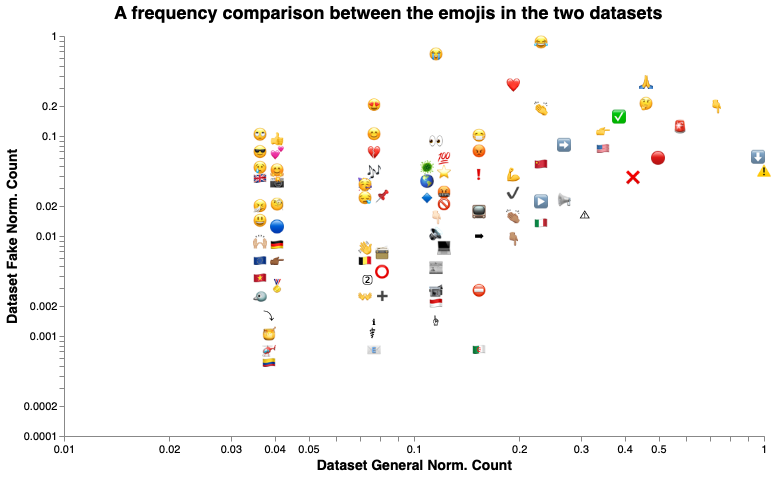

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAEAM0VwAjgzjioAT21Q2CHEmVjx2pnEwB3OKe3042xG2EaCG0aJx9tWSRMJAhXaRA7WVlQsjQBGTcaWXo0AHYABnyZeBoyLDQAFkKZJAZMNggaAC84NASkWXjI6LQAbVBxJARW9DYGRQB9bpQZYiQAGxMIPtAAUQQAmjbAXg3ACr34gHFTOEUF7QBhNmIstHzKAVyANgBOACYAZnynt8-vmQAxJAAa18l2unVQdwAjPl3s9cgIBO8BFDHgAOKHPB6vAC+UjWG0CbUAPBuAS93iYAr3cOx1O8wuVxukMosLRFUeUKRrPZnLZFQBwNBDIhd0KuSxMIK73ejzhUIq71yeIJmxJ5MA-7vU8QnM5gxnQnnc95cjlG9IgQEg+ng27Mwrs1GvL7ir6w6VKkDrFXoQAm5IB4P812rpuuFlExHy+L3D3w+r35luDNteCNZ+XhaIEz3eSdeUMV+I9hK26G2gEC9gO0q165lGtkm40GvnmgWVkOFfL2x6OsUol1Sx7uz1E9DEwCj++WdUKbSzawa67y44LrUzCp8BBjYfDEcjUWjcfnB0WQMTAGn7-pkRy1FYTy5rhvrt8bFsXeoHhbagBlycdBydMipRyO-ABUILi2U5SvkSYCK8ryZg8Yq7q+XogNsgDiO1+oFMrkgE-BGOG5CB17Qo8Ly5K8FS5AUjx-o6e7KkOICACjkZ4gBegYYdCeEAbhMYET+IqruucIIkiKLooh9GAKrU6GEcy0bYf+ma8UuIr5H+GLvBUiKPA8FQ-AI4mHsSgDnu8SgB3u9JfHVve1nzk28Z8QZOyAJI7xKAH-7FnKVZM63nOVFKVWhSIqpa65ByGYyp87yOcWgBAex5VYKYlvxov5EJQtFICAODUzGsVelnPHe3nGo8qVTiizxohRjzJlUab9vub7FoA9TvxSGUK+R1SLPKVy5rjCQlbqJCENUh2yAOx7rU2p1PmcmaT7scyaLogI+QcjB+TlZVaIZdsgAye8SgA-+5NN42YVfl2c+rb5OmnYvO17xyhV5EZcSgBfu8SgAfu8ddwaWdnU9SKrJVNKJFkRR7b6SN9GocSgDf+99obTfe3UXQtq0UQqK4bYJ8IVDtgDLuwj05-Q2AO2lhcIVLpAgVFCrxA6pO2AEc7COvFxcncWTq1YqFS00-Kf4rQiO0ocSgC-+wjYbydLsaozJorOpK0qyvKeZ0YZJlUueNITp53HS7h7xcxtK2aZVYUFeBUVQ4e2yAKy7RMzU7XKPs28t0zGtMZhBcrtlhO1OQjv1IzOXNYrT9NU7CxHwq8kPqySgAXu8SgAvu47p2+a79l63a7Wdk6PZK-VCfDoAr7vEoAf7vp0VNfnfN8u5w6BcSq6xcFkhxnEoAn7vVyTD4Ay9FKfZLnGjzxcuWatTfdi3fZwi9pnd6zBsc7kKUT3ra3PBtmKVU8NUvV3xKAN+7vch3XbsOTbJLH8SgDPu2fs6kxvAXR6D5GUdREGD29j-O7Z9dJ4m2CubREltIo7UAF87ksn7OzmpfTebI15omeNvXcAh0RomujtQA3TuS3PiaFGgCc4U2eFTcOdMGZ42vsWQA3ztE1XuzF4RsX5XWqkmXclVawYzVu3eigA+DcAOi7f9TpZ0ulOKmVE0QPSwWpKEGkaYZUAJyEDCmGjxYcQ1+Hssxe23jmKo7CdqAHk9hGtdOolVYYmZ4uZ5TtTeMRYBbcDxtH4YAAt38GwORlzD+7Yv5QmkRUJaSYdqAChdjx-9DREIQQFbRZEOR6N9tVa2JdkKAHOd1RY9sIaOiVddsecuyK1bjtQADzvhIzl1Y2QUzahTARFWEGVACF5DlHW35PJs0yZzSxy5lqrSgtvTaFFeHOOLIAT52ylmIqV0lSZFeTSP8apem8iqYZUAKyUIja5iLRqtAJQTTRZnaqtF6gBt-eaZeXWAUImZ2Nnk6ehS+wvUANe7xJADvu+ss6myG43XafdR6rIhmNSPIAG93jJvKuVM6sjxroYO+fI351CUkvN-trM5rSLnlP7uCxu+cZ69mlPCvhttAAsuwjeB2cApCyolBDMmY0TSLFC9ZOD9kVsRkklfWXx16aNbFHEGscfFUTIhlQABWSnJZT+YCmKKWaTjqgo0dLngZUAKDkQd0UuzJvI66S10y9PWlBDKgAFanGX3KJZLuWLIURgnSekdqAAEdo100TXiOXDVVMa8MxZlIrmDKgBcMntbAx1WzYm6J9gY0ijSYGXNmlzfJzdcUygVTQkAQqg7stXvhTFiTSJr3prkbhuaMqABWyCNqrSVOumZIwJMiFnqWWYm-hgAUXdMX3esFiuVTTdZmbMuY6acnSomwAqeQZLZd8bJpqpwQQrXM2R5ra0pMAFDk4tQXPzbcuWE2N+qbhEjuWiBLnKLuZXlPWjD1HGzkRa7SubrWJu2IAWj2-VOwDTJRE4VwKQWgpmJxAL+GAAXdpdGKV0ikdP4jSuz0z7L7SkwAD8T3q8Zi4B1SLZ1OSbu4sgAyXb-WquDNzsV3LdImwAkgSisPWiiZ-6clTg3cJbc6JMTYh2oAGZ2h0r2YVzGZUiq1nrZBlQA6uTFtI+mLmIHOx7JzDCVMO7hnIUAAo7THU0sbg2xyt8zOP4sk9sQAIjuyePaOsttoBKUcGtul65dAAPuxhgB5HV1VJCohq2L1ACZ+0R85rZI1kbHau3lpF+VfwkwC7YgAiPfMxfdzIpvPQW2UJ4JibABtpE51FIZh3s05ZZkU-iCoTtmRx5DanABZe0Fj5QDsMFMLkU69gAKnfy8bYDgThNgdE4c69gALHa02onTWzONaStR8eOKGQCAFSyOLaNj0KTaw3IN8SQ1+18x3QAsPswe8o+ye1XQNInqxB3r-DADku5VjNPN-HaSphpOOXweuSeJIAU-2dsAdtNY3ND0wwOKCqdgFKzBvy1c5h67U9Ci3dsQ9yFn6O531TldlLtplu1dWwc9banADHu29yeH2LMhfJrh+NcoFQZUAAwMCOj1qJGwPa9gBS3dxyR5tyOy07UACY7oOUeBVNjZ2pdnE1KNJ62YbWTjaKandWpZqm-OAGA92nunVqho4TmvN-PRqAFkd4XaNrGwt0n81MgSGspO2IAd525fuxQZC7nWWdqAGq9+bkTWMRZqx8Or7UdqADId7XQD9fKZnVL6GgAUnZayezFOKi4q0x3WwAzrse4J5ijjM7Ou5sB-RYkgBI-aD5zyVmCvhSjIdTWm2W-OAHg9+3etkTkSqEVguO1ABuO9n1+HXLWXu6z-ROcfDZVegjoib+ips7UADU7perrWdAS+iB17ADCOx38djvp01pd7bWHg-lzHaeNK6lcqjQZX4YAFd24aT5UgX73pX1eAAk9tfzJwsQ8t1D6b0NABSe3vrFxXZ54p2oAST2L9J8pqnyhUcx87EAPI7h0L+5iwgUNdfUNx8061AAaXZN0IVYzukVyegKDIW2mvUAEedh-DsK-ONN-YsQAKp2R5EsfhZYvtIsRMDlxMdpABpPdrxHVPTDwr10ir2vUAGkdsg+TL7R-FPChSOKoNAo8cuLWFiFpNGJHYLEXDLdjJ3UfF6QAe32H9xtvZm9DFE1ABiMjZzAlVQpy2WQNjSLg4LMheQfy7xqR73qTrUAHLdtfBee+b-HhLGAAoSDg7YQAKD2GDFJMUUEYJiJpQoVbprEdpABCPb42bVLTRhrXD2oNz3+VGkAAI9i-afSlGVGlaROAhFQAA-2H9SFyEaYX92CdpABAXYfy+UgIeiV2emvSMVXwPWcyUP4xUPlkyxEKWWfR2kAA+di-OeaxVWT4WlZaHaQAWD2HDRtLJcwwZP4D9pFnsO5AAV-Yf3LwvWCJGOhkABGdh-DfNHHad-ZeOTPCZLFHeJOpN9GCZEeI3rGGI6Uo+Lco8nAQtGAzLdGjHmE-W2QAfJ2ejjZ9NADDN0RbidhABavYWLUM33uUTWJEAEJ9xQk6Co84sbHZSHcDNXA4wAGR2L9aoO0PUcxQo44MposwDJkmDciFd8joCdppcSieCUU+DlCwSltbkStmiGUkUiSxU8cOlyC4ND8CCYQYc-NABUnYv3YWzS4XZB4UX0AEJd+EqlWVWlBUN4VSBNdXQAKj3HjMVPYm9M0kxQiBFAASXe-zE1+3u3sQBx2kABw9uUr7NmGCAqMhNLPXKmFU22QAOD2uTkFUFro45E8gCEVF5SQMS4QudJ1Q9RDr1AA0nbtPF15J-z9xSQADrkjk9UiI4qFF9ABjXe+JjV+LwwRUADb9w0sHWELCTVHpLeDaZY-dWk4jNqBkgCXAzM2oqgvSPPF6QAOH2PTFsc9BYIxZ9RT9i1NaDiRAB--YzLp1WgbziWkKVMX0ADxdjUnDSk5WKU3rV4QAY4JezBDPMBjfFwt3j0BHh5zjiSTQSCsc4pCEkxdF9ABaXciNggogqlRBRAVHZEj1tkAG5diY5wgqGUSFbEnaQAGV2TDr1G0tz3tSTdzX5niBorjhp1d0DCTcoyiQSziAKrpkz0dVYXpABp-Ygt4L-J3MJ3V0AEYdh-LUuxNmSFJ7HaQANh3IjzcVtwMMp3hNyiyoKRQOc68mSISj8oS2TRpABOXYbNY0byHLFwoh2kAHMdh-YfXnDSGwovQsyCk46C8+WC8dfcybWQhFYHQFC-bVPMgZJ4dsgFT6Mw38xHf8zC3rSkYkVS-SnPQyuDICzdajUC4yo+JlWi6S-iSygDF6QAJ93iRAAz3a-PV0AEEd4ElyjCrDH4pYutQAE92H9rKqMho1yQBAABMkCq8hgsqQZ273AQMPV0AEOdyQgc4NGQsNOtdDcygKBixkpgpcsLGiDKQAITIkq1jg8mDdDbNe91dABKPYXLRhWg0t3iqieAyihBoqku3JSrg2aqZ1at60ADMyXKhU3ilvf4zywAX92dC0q9CMr09RpRYeySqXNXLMzyLIS1sXpAAX-dmp4oPIWvV0ABE9vfTUmxbUgijaW8lxQAH93v82C34+VwYrSdhABwPciKVJ5Ij1zBevQH4UAHpdyIlkn7B6+RDKQABrJ6r+C5KPN10XiQK4rthABMne+i5nQWdKjOphmNtkABydvGpwo6wg27EmnYaBXa24Iys7QAGv2KasToU8i4Vfrix9p3IGbIRo17q7t8KHEwajxAB8-bZoOuZKt1ZILIln5qKCmR2kAGI9qWunS42y2jQqlJBtdWynOtQAdl3DpABYAkSv1ouM+sqp+p2i10VqZr80AFA9i2+WcGAVIDZimwwAQD2XbJ4+q1wET0xO1ubkJABIPd9r1n5iOylRFKxB2kAFKdiOgKVs2I8Ux0XSHaRA+25W69OKbOty69QAMp2k7uVXUg6kTu1UT-jABmfZLvHVCsnKoh2kACIduu1dESlTOstu-IRfQAGN3u7bRFjG6XpAAmfYHpXBji8zdp8xekAEH98ew6li4669ew-OlLDKP0bujKQANLIF6O7ncdoVq16+zJiutkQXp3ovpj6Dbdar6nL2JUqQF1qkMdpABLHfFhNoGwXoUoKriqhF9CGrQr4mNjTHdS7RRM5AykeAAe-uYphrYuhkACJdhe6K14uyyTAQGB6+9rSgqYq9FJXILB++wiL06okfPnDKV4Ih4akhuDBu6-JuxNd4ahoB5SCgwIqsmglJCoFh4k2hiq9G4C2yrGjq7BwiRfQARF2F68L-tgFabixAAMPfHrIdEs0kRAykABhyNyBe+h1AxfQAYl2B7kQ8Hus887RF9AA6XfHqiJTvn20qQn4UAAdd8ep81w18jmzw69bosRq+dXQAYJ3x6Qy-9oqOD+FABXXcCatsnuXJDr2nHrTtUlcZfKhRFi3sTUNR8eUh2kACRdlBwRmy2KnaO9TJl8RNBdeGEpq6U+yvc+xNb0ce1BF4WmXXIQwJYxNJ9XWXSp24RfVDOGM2wK6Nc9M+mmF0g4wAFD3x6s1OEQb+Siq3IBmF7Ak3hny3C3zr0XIFbiHgGc71dhFunlw5RqpaUHSCbaVsFE1soOmDjAsDme7r1AAqXbyasIKaM2vUACwdheoehhnaTAu5naQAUl2B6yJcGRnF9tt-nr07VIX1d6CYWDjAAKHZQeiaqu-n9OubU0AEY98ekZsx7DRfQACl3AmIGjRoJOxGmyEXpABWfb3u9JqLErftQr4Z2aYP3t9LAu0budR0bt9xDsAC4yQZ+Ui6xSrNWJwASJ3Amha-sdT2xF9ABGXc5e2bYZCqTLCt1rla+d0aLmpMcpoZZfXv+MAFv9zV1V4eo202uq2llRzu69QABp3rHyXTTmn0sZkQ7lV4XcsMWdLAAIffiYtxhqIOvUJg9b80ABidwJ4Zmp0Z8Sr10aFyI4pVvUEBuG2Roi-4oeO+vV5Vgu3WwAL12B7cwVyPbItQnABh3ZNYpJ+f+MAHZ9wJvbPmQ7Zs4WOtBMkNhxwAPV3v68rFTDzE1AAKcgLYrpJd3DZk2qj0ACd9iticqt3WwAcd2p2UDtW61ABVXeeZxhirefV0AFmdiNtRkxkImwwAaZ3YH8DZboTJNABesmJZ7VJeNIpdCfVLbehgiKfaJVjehh8NfbaA0cCYxq1puJ2kACkdyV2G4W2RsW-hQAN13kX35p7Vydp9gv3ixABVHa7bmsuqUuMsAE-9k9-1s9hB22QAKB20PhXf7F9AAt3ZI8HIw51t60AAIyQVpgmRmVtN9XQOJD5CYoipxN4UB20aQAAJ2cXCan8KEx3DJABFfciYZmtoKFicAE8dkD1MFNmVsW7YQAPx2qP8rhzr1AB2HZ0dNYYZsMAGydnFls2O+felRNQAHgJGPMyfcWiFQ2jKoXpY8OPtgCSE2s2k24NQHg7kSb37GBFABQ3f08rb0f+JOXfdtmKL5p48ZpDxFsIrWq9WvUABg9+JxL+DGzWJlqNzwAUj3rGMFzmUjn9ND0y3PABqncCfmu5JmbE5cSFI4+JEAA596xhEd9ZEc8jEbSDkYzYkQAW9213NbCn-jAB-faWdBajZekAB193Dii5e9XUWTz1h7znN4ylCsWE2y1rltsLVrfDbX9Jr-r7Qnby-dQ-btTQABj3JXp24155r1AB0neUdYOk8nvq+LAEskpW946YtPahzluvUAEUd+JqcjHbM9o9MHaQATj3rGA28L3vkJbqmvAApfYXuxJ+QKNicAEE90L27jQl6Y7szU73zodgLl6QABH3cfF3W4bC4SOP+FABo3d-aEaGm1qxsAHw9q14Q8hhl69QADp3Am+KZnJcdoa9Tvvm40dpAB73YXfO7+JSV43p8Nq29s41rgfw52kAG49yJ9DkVhH4kQAKf3+ntu4uBaVWwul2EVAAl-dl-gpekABn9pluk1bg6iXy34ywACP3pHlOnrWODiViOPAA6MlV8ELZYobrUABdd5R8zsUsUdO6ctTV+z+kPrZVBzGnaLPNzwAZj2XHtb9so7BZenuyVe5uqaAf1d83TvqnpiGioudhiitmvOfujSY6Yi7GfUnfiz4vWW6WefZ0Nt9nTela1u1MhcOPAARchT-dgt9bnu4RXGLc4NKa88rF6H6q3V-+-PZ0sAED9wJlpjuhH7YQAUZ2JuOH935HkJGM3O-HFWm-u-pbu2avaO1NAAnnYXvGv0MP7wTc8AGo9trqCXYnBAvI9cL+2wQABk7N3anlSWvSAAIPej7pVti7XUAYAFEdnRtMwlx8lf8RfVyCXx27pEvqU9WTi9EACt+9Y0XoslF8UNenoAHXd3AWv3N548LufmQAHk717OOLe0dZNMXowOQAI+7p-Ssufx2ju4mugAPP2p+QCH+tpwRSABy-bIEy1-ui+QAJu7FrcQTnDd5MCO4gAEv2F6JXF7q-h2iAAwPeUbWsw8HBQACBkqg1+GH157q5AAJHuw8z2SnYWof0AAMu5px7ZXUDigAUT2FmJvO-mbwEYvMN2bxRfIAD3d23mqwOK74mugANX2IhZrBFB9FMpc8lMffGwufnp6B43OgALj33+yXCaplQOKABhPeUYwFVc+5Ivpt3Nqnd4KvLTRl92ZbZsDqMnItmi3VyAB6Pf4GRsa+16QAKh7cgjfpRUTSAAgcksFXQ0+wjHaIAFQdobn+xG661AAlLvKMy6YDT1BAwyiABTMmUY85T6YtEVHX3QCAAIcjGEUYheGAn-DYUABCew4M35ODbE+vQACD77gp-nFWJCAA8fcF7HMUEaCJ0uc0C62xAOnfOitGkf40dD+gAOZ3nhNHLGoADOdroXuzBbXpAAaLvxCZ2BxUWI32+738QsGUOdMS1-yWF12NhQANh7OgomnoIyLXpAAWTs4teq+8AOmXVU4atTuH-DasYi-w7c72Trc0hlhDr8ITyTXQACz7aAoMrMywGJpAAz2QpCdhB9a9IAAQdskSJzSKfUOCgAaHI8hT9FqoULOwnVAAAtsCVdRgAIx3dRgAZx3dRgAYx3dRgAFx3dRgAfx34RQRfBhtiMil8l60OHaIAHS9qESKyxqAAovdRGS9r0gAZ73XR8DDKIAAmyUMRryNqLM8BPXa8kc3tKeMEUgAAf3ZhLPTdgcUAAguyKOBp5pQyvWJpAcOQicl6eyDTkUVywS6C0iNhQAEh7GXVNsl1iaAAAPb9Y2MY+-wlxIAEPdutg8Hz6Ntp8F-QAIBkJw9ur31UYcENho4kUJwLNL79JEO0faNx38HD8DqtQhzrE3ArLisRAQg1gimTg+U8BgwhbgcVtJudjcHHQAABk045kJXU5BksTSXA69IAGg96xlyKaY8iyIoAmEkCOcrGw9ufYGwoAA5d6rrqjpHVQA6O0QADR78TFFnB2qrXo-KOvUjpmgR78JAAsLtkD1xcoDgoACxib0WR3+KABvfcgFy8py+JX8Q-V2YHFAAITvSifS4fdXIAAG9giVII2yAA13djH0CmC6g+XsZUAAT+1TzImMNdagAfd3FOzHJ6qp0ACpu9I0RLgMye16QAHI7ck8ugpPYGdj0AgADDIbxE9WDoMQQmuk9K3Evcb1kACXZLpLO529r0gAcr2Ax7vNTES1O7yDWKi+QAAe7UYzfgRx2CNYTa2wUAs5NBE+idogAZJ3qu0I4Gof0AAge2wPvHvjKWRVOgSuKGYIio2NZf4oAFL9vfi63HHygdogASp38RmMf-ESMXyAAsXfTGvMQh16G-tuMaEu8+ytXc4XM3VyAAEPbfGzjnWFpC-vwmNo4C-BO41cX2WrExl9B-xYFC6Pp4jlKJ-DZofk2CHoM-M2RJXv02qEmSNaZw4MhRE0KAA5fdYm9t1cXgpKYNNIbc8JxO0QAHA7SzJJmsw8YvQpexIUuN7zA4scVoF-YkCZhO7rTBCyzFwsk3Wbq5AAtTu5jhemAgsWpkAC8ew6M4a1MUkmUVSasP84aSdoP4nat9MDTHj3R16cCmjOSlMkgphE3WoAExd66SszcbuF2kO0QAC979kjQdDEABiOyDOaniiEUgAKH29+f3Vyf8UADZ+7TL4lnZ7MTMraSzOMqAAe-dJl-TbpHhRfLk1O4ASb816CaG50ABcu0LLFHgy-MmmNzgPg44zUmugATn34m4PLVN1T6T5lE0EZJroADF9wJvGKeCJiTmyY4yoACV9yqQtKxqAAS3amaz8NxTnPkYAAFd5nlVIxAAdr0gAPZ3oZggxNIACrCSyZIIOkHF78TXI+O9VO7WD++amT-Mt3qnN9TJamfaNnOd65ycR16QAPQ7bstBq8KeSvI3OpFNzoAD4dm4VCTuEPR9egAIf2+ZKZDbH0wOjHSc52IwQvLJEkHFAAhTuKiWCyo2Mv8S8o0k8ZTBbCYhX+LvQzK6MhuBMPmEHFiCDQouQPMDQEy2JkmAaf3N3ElzdagAR12YO31AyW0IOIVY3OANJroAGH9j+mtLnmu8h5L0YFFXHF4fy607iDjuiSa63xdWJ06iWdkABj+4Lymx5jMBmhQAKj7+0zwZJn4SAAMXY5GrzCsv89XIAAmd8edGXwE2FP8dUneSfJFxnTJiO0QAIh7Tc+rC3PhrXpAArHsSzVm7jaWYmkACw5BXPT6JpAA+mSeSuZutSKm53fqbd+EgARt3EFmHSTBo10l3iOBj4hKSkkACoZHgufwqiMogAQrIaF1NOGvr0ADV+-wpPFnYh4K8t+afOMqAAO-aEnwVNCc2JroABp9wxVjPVzv1YYfk7-hgr3L7yE5yC6aZiOPlDTBCLkoxX5kAAse0HIWls8dogAOj3I5iIoyT3Ca6AB8fe0VStW5O0QAMc7UnHlHBKIHXoWY9PJ5pyNykzpVOROJxeXwOKABondInrjF8gAQN3JFz-PzIAFgd6xWjhsKAAAHbiVTd-igAMP2mlcVfhD3K4lmLBCC8jWaNEABMe8wvJkAyNsKC2pWjjn69ZAAyWSDK28xY-hIAGZd2-qAp4lYLesgANHJLJv0lhRTJeA7QAqxYotG5wJKxcxlGMzmSEtGiABLnc7li1iQgAO-2NlGzGafqz7KSTHsb0jKJ+A45MQtlgAEN2EZfnORZpJAD8JAA1Lto8PGGPPEtei3m9zX5+yh-rr0JkHFAAvzs9KehCKQAOr7l8wga0KGWABLXfon0sM5X6McvT0AApuxUq36jRMJzkzGZUrUyABcPd3aOjTGYzNTIAAE9ulWkJ2iABMHY+U7RAA6rvirzpiaZNBxwaRbLjaXZPuSQsCVPK8OXk3EXsoCWnTUhiq9XEJTc6AAJHeQnUc9eO0QAEA7bK7ycWEADhu5ZN4ldzJMgAHLJLJ6cjgoAHmyV1YcrUyAB0PY1EIYChh-GnE10Xg1zPFpTBFIACx99pY3RsKABkPYiVoMol16QAO67Cqm1rrUAD5u78oRSABdfYdU7RAAeHsczdVAi3rNvW9UlL2WBxQALg7qiikYzETSABjchhWk9kZ16KxnLPQHCzJl0MUWMQq76kL2Ii+QAAG7Mq69IABK92dSkkADw5LmtlHq5AAgTtcLJhiU7FYaroYGdwu6uQAG17oaxnJ-xehJE3OgAbL2i1xlQAIf7Og5ZRuJeiAAefdAn9JwJB8a9Hbg45aTF1xlQAFz7hXMzm3zFLwriQgATX3-1yCwAPa7ZaxNIAE4yWRcOwfH3si+bio+VqujQvDIpL0QANz7qS0DvcJ2iABdne7XqTIGQbOOdyvZXQxAAS7vQav0Tq09QgOZwIpAAZ-uMaHGqc2NcKEXyABBXa41R5AA8-tCbDIgARf2xNJIQAH37Um4sIAFWd+DbrUABau0pu8GjKcVfZYJc4oOKAAlHbk1HhAA4vu3qzsgAWv2KVy5d2jfLUxhI3O8OYsdsEACtOyxufpsaDigAex2TNX6Y2hhssno8oCfyF6IAAF9oqcE3mk2FAAWzutrJ5Y09XIADWdlzVqMP6AAeHeJVOi1MgALh3Zl-0u6dekACsO15ocaAAo3a3Uby1MgAch3V1jatTIABu9wrVHmTjukf5B6hyX5llJud9o-irDXBhGkELF8gAAd21NkmdhZZKBVJdzZ6uQAEg7Q2vzIAHE9zVeOu1VjZvFSCvzA7Ca6ABM3fq22xAAbHtqz8xfIwAAm7Bm7YCVq5XPKdNkmQAChkiW8NS9EABZu9tu-boLHla8+aZXMXwBTeNPTf4oABh9mbaNEABYe2lq4a9ZAAcuQWbUWWNQAGM7pWzMZJgACVSawzovkAAtuydsAAUe5DvgnWaAUgAZXJ9tYM2JjBrjkrapFfmaSQau6098TB1WvzD+K62Lb1+F2nlQCkABVpFhKfU4SMo+GKrYxOMqAA2fex3Xy-6gDPdSPwBRzlix1FLZX0026YamdPneSWsMUnq5AALXsabxdzQ3JVSoyiXjkdh63rFJDc7NZ6egAJt2Tth20nXioPkApAAfWRPbhwgAa33HdCKwAAi70W0aZSPVxKSqdiuwIeuw+3XpAAQXt86bBG2QAKi7ru7YIACSdgzcSEADj+67uJCABJ-ej2AAwvdd19Znp0rX3iCrrSABFXbh3VTdagAXF301IFTNerkAAgO2HoZWjRAAVDvR7AAlDsnbwKjO4EXBmr7pb2dukybtMTabXpAAYnuPqeWz669IAHKdkHbDOMqABgfbr2hNAATLv-KmhWmmjY6uQiABYnej2cUOOgAatJLJLQqza8MACV+wDvoiAAb4mL2LSkIsWBzYACS9hfTtEACJe8Lt13XpAAp3sGbAARIT1rad-OtTFI0Ck26fFfmD3SyPyHnrzWVQyyU1KHWxNAAPjsvbNNghN1ap0AA4Oydu2oOaitAalrXTMMiAB4fev1Y1AAuTvT6epgAfF3stUsymYmi0ZjrO9TBbvaDuG3bz-duKlCaAaQgKEtlgAaV3495IInt9tXQTLYmgACB2KDO0QAFE7NB1hXQfVzHbgDXB1baNBAVa619LO2jbbEAA8e67sABfxNHsAAMO0srH0vRAAtvtP7E0gAbzJTlN0+Q5cv+KAAq-ej3ONmtM-fmV+mX2FyODWmsnc0qQhrImugAJP2DNzwXhtTs4PWr8VamQAG87ruwAOmEsB-A4BJeiAAy-fj1qhvKUh6AwtqYNriudi8hFIAC9927VAfVxMqRDKkXreosTSvYHNE+JroAAzdq1Vp1DRoTAAyLuj6GGdQ69IAHWd8-YZEACM++RpV29qoMWywAIm7gxkkEPFX6vbfGvWBdLjJQNbI0DphJrVUZ2iAB+HYM29SrDCKQAFH7rRjwUkh2hwadu5y-zQ9B2g4UmugAOv2SDL0cWtbpUPk7RogAbh2cjnTdg-kb7JH6Z616QAOE7eRv8fjJAOqHoYgAcB2njiaQANfEJ2wAJl70ewAHg7Bxg4oACW913YOnp6AAhXcJ1BMdogAfB2Zjw4ckNwQWNZN-ieog0caMACmO7qMAB2O-qLtFyGLlCfL9IAG3d4vgrr+OoHA1c29E2dkAD8+6MaRmUb1cgAMx2V9DU-kykfdV+ZGs-TcRdHsAAoO67v4SABfXY1NEzkDGh0Pg2oAP069TkR-4zruP07RAAxTtQK4DYomwj2OUPRHbdHcQAIj7sJ9XNB0dNtHIThkQADb7QpnSidRNoMc39FputKJM12mmgl-hrGkgY71gmmC8cn0ySEAAB+2yfmVqZ11fuvkzqvm6XadKgAUH3vjxlQAO-77p3rHywN349r0gAPj2AzHcQAK77pJkAIADBqSyayJfrXpAAaHvFnjFs81Y+I3+KABnffrPQxAAnDuhnATutFEXLPlPDy1MgAIp3yzyCwAHC7BJlqQcXL2nd158OvzIAGxd0c4ZCQp4GPDCpjuI-MjO+Gfp-envaNEAAeO4eZJCAA1-ebPEhAAl-vR7XoyewAL77vZvzIAHad5s4ADgyE7YADk9mU8XLlOnnVO4F+M1RIOVzmdo4FnwzmYbjrHr0gAWT3uyYF7MwmffmIXr0gAAL3CNdCtCYAGTdk7YAEq9qszTxejPJ+z+pydf8RMgxrKTr8W0wdoyiABccj-3kK11vWQAITkJ5xgZ4aQiAAqskfPFgH1Xp04wEajyAByfeEtQCzz9EVUSaavN7yIT7x6GJTpQt4W+y6FhFDwIYtRm1jAp0aFvJgOSXkIQ+l+UpeEkvQZ5rFgc0AhYMz7JMgAFLJD9727hQijOpudAAB3vNntggAZp3gr7m0E-BfwvQXF8gAHl3lzfmQAFM7Op3C1FYMvmXoYgAZB2DNHayyTUannq5AACTvZLgYOu2JoACK9184ABF9yc-B3+IC7XjTp7g1HkAAh+xqemkPKXLOcHcyXoOKABaHesvEhAAOPsGaKgYu0y2hYyuHhAAoNQGbAAFmSu7AAKYQnbSkbnXNhBd3kNwfVIsVK7NI1rQWVlyCwAOK7CV0aO-V7n8JAADbsnbAAKXuvnAApPt7HAAGruDXAA7vue6+tiaQAFdkGpwAFK70e9dZFb2tQWRLKl22IADid6y6zgc2AByPdOv0Rv9tVwyQcUADKO8nsuxNdTMDm0+DJZeEZRAADeRVq8zrOjuIAEp9+y9ZPVwCH3DoNz5YAGv9gzYAGfiV8ypQc2+TiQI53G9CLfom0ObGplfIwf0s31jKgAWf2TtyKqvjedYM6VAAqvvJ7AAyvvw37yDmwALy7f50aCTK5vBTr09CNzoAH69pG7jqQiABEMiVskhAAfvuu6tGKxxi8tq0tyXDwDEMo2yP+KAAg-e6N3dx96uQAGV70e9JG5yOk1U9jfUy86haAQAm6rCKcuJmy6uvxDLvWQAItkJ2wAIk7zZ-hOtqqOD0prLiQAKe7J2wACo7J2wAD071l7YIAH0d6PYAAidk7eavUth21B2d8GoAE7dnkxTciGSYv6TXRzA5u2Nt2EhBxIvTTeUuqdAAoLsnbAAsbuvnAAFfvO3OzCKQAIX7yezWMWOJCAAKfcaventLhkJ88keguaEkhFJ2O3BXJExbvdBxQAEI7wVxOH3bRFnZZJQ9hy-8QenuUDN3qXe7TZsJfa2LV0bTSTehhJ9iQgAZP29jgADz2NTpio+0PkNPh7kFh922+HfNNTnesgAAzIN7sluKoRi2URneTQt3M2X20M7Aj1od3B+CS0Mb7iQz83zSdpv5wXgbODM-vEqWO-GSHixs7OSDTha2YjXhw20MrQWdX4He5dfYvkADau9HsAAOO9HvmJucsz8um+4GJSSABMsjQd43-iR8Qbpw+dNR5PK38zO4UG2uLUQcGj5q4ZBnlwOJrDuaB-XqjyfT1Huj-svbarlmQWbj05PcZeEPf35KQj-4oAFF9s28OEADy+-HsACC+6Xd920OAVIN4ey9GAfnbq1Ly+iAIHGsaXJrBFlJPkCSf1247jdkAL6ia6AAGfej2AAAXeT2ABsfej1lg3OgALR2DNgAdKY077ElQSds-z8PzHJCQo8OttiABF3fj2AA9ffTO5b1cgAEh3gr9M5h2lZ+n2H2TO0Tsi0+ScSCYzO0I9R-RwfjO8Hbov+4eCs79O2F6uQAKQ76t6GIADadk7SIt5uc27HSZrezsFGeC3VnKTmK-8UAC4+9HqWf9S5HrWhxrsvCer6glXj9XIyaBsRPNLbxh2zsEZMbWJ19z2mzze2AeKPHq6X+wQ+LCkE3OvuvS3c4kF-ONsgANN3o9gAC53Z7bmtTP9e3OIPI7vWBHe84INtBAAkOTKPubdaJu1tz2OABRXZO0uQbbrT1+Pldi0HFAAwLvR7AAkDvJ7F4gAN93XzgAaH3grP5LY-8WBwcPZX+4gbs441BGPkzw4I+M5YEfsXB16s2Jp-k5dzOc4Y2uRovkAByuydoJWH6yXyNs7IAE990u5BypeiWBEgAHV3o9ojh+5TYOJrmvX7dnSoAGf96PYAGK9vYzjbsc9Wb9UeZ+W872PL7vnspsy6k+MoJ6IXS2zBcm7UyABfHeT2AA7ffj0G9AXPzpNw84RSAAqfYM2ABfsmj2AAEvdfNHJk9gAE32NTgAZV3BrgAFX3k9gAC3349gAS3207gAE13grSptxf5JO2ABrHYkk+9Rai+QAH27fjhFcVUVe9Zd1XLvjYmkACPxMFdstUO-X-dyTC2ej212E3kF4F01fVcgBAAH8R7HiUarq58WEABdOydqj53vQXxYOk8nsAAx+wZsACjZCdsADeO8FftFpzLHNhQAF47wVwABs7J2wAJs7BmwAH+kyeoEiveTjmRX3cVNEBk5YdeKHHh8JeHu9vt+ZAAwXt7HAARbsanAAIrvx7PpT09Dy9EAD1+wu8ADVZDRdSOJpAAaeQoqPCaKwLf8VFfZHYnxNpF9JmLGAAB0mddg2XEigot4m6hdRPr0gARb2DntsLIRc6xdqZAApzt7G0FJ7zaxm9LfGVPK6htd547IcvRAAPvvR6t5tzuh3J8fsIpAAF-snbAABjvx7AAnfsamHkwVpPmO4I-yODigAAZ2TtnZdF7Z-me4f-igAYX2Pb9nMHi9BMi2P4X6+bJ6ZUpDx6Z5qrux-HbOyfSeNSXrO5m50pJDDxEbny9uqMsgo-PHzqPMCi1cmeEX6nnSvRYVf5e9HoHjymSHS-Eg+BVX6l8OBMglfWvVk-1x3GTiZehv2XnSp5XceQPV0k3juOXB0dJe+ug32b8l8K8dwkh4bib9k-4SABZ3eykWlrWh-XydsB88CU-Jkp5Tz5L8k+fJTl3nhztFO-ne-JZqiNza6Nv-3bvr3h75LYYe9KXF337YPd+B+Pfr0Pnl79sDe9DeI7trxU35NO8XfQfpL-Se-vVynfTvIPq74J-wcb7tgGPn71D9fNMLevLrwyIAGl9sH9lS2WUG672HrJxt-oiAA-Mmsv8JAAR7us-AA6bvx7AABPsnah9Mn093Z+9dqZAA3XsGagL7ZyAy7fR9+TH9pPyT8WAeJudAATXsGbjbo25XeKYXz-FAAwfvx7F4Zjo12XilvuW-MMj4hxi5w8gusatdmz0C7e1BCg9KSZByduY0K+xaal2Z5k9yTZPtgElXT5C9Ydfom7BmwAERkEn1ToAFm9k7RJXt-FvhfI36GBJVC8O-wvNvp78nwXfbBAABzuv26fVvhnwZ7OzvQX7OP9Z8J-4Tkddrafhu4z8MiABMffXMiy1MgARZ2NTqGM2nscACRuydsABoO3scAA2uxqcACju3scABmu3scAAjuwZsABJZNHvHuR+do6173-T5-uNeO4gADf349gAWn3k9y1LZYAA3dy32F7r-F+dKgAD33rvxYQAPA7wVwAPx7BmwABJk8ewALv7wVwADC7Gpur8b99-1+dggAEs7J2iO682M9h747QWZlipL+wJif61+RftC7-En0kb4++46PN70QgAF9kzZoACvZCdqAAVXsnaxBIL56egjmZ4YqsAQn6YupAbrSAAXnvBWgAP071-shCAAxDuMBFDgsyruv-qgEpeY4BxyAALJSu6gACNkBmghqDWi8D15Zeu3oADJe-Hr2K0AbrST25fmGLXogAJo7J2kzzbmZXmVqBu1GlQEHEgAJC7yeoAAO+wu7EggAP679LtrbLqcgcZTx+snpQFxO+ZueZEBQft1aaBu5qNCAALDsnO-TNnrgBTWD4EGa7CgX6n+8AfJ4csqfhQHdWH3q8LA4q3tq5-+5-g4ydOCzPwgW6fgVHb4edjvo4pIQQav6F+CQQgHq4uLukHGU5cOIFDelzm+7IQgAO47NfpEFaIG-lHiAA6-s6BDgRs4uIgAMG7rPoADCu9Hq2WsbiUFqYSpjgKwuexn0y2BQvvp6FBG2JsYVBCzomjPAWHvkFcB--sWDUGdHtehjIbnIbSseCsgiiAATftU+BxOzYM2gwQCiAAy2R7GgAAS72zgobGUM8okoXO8wQijqgWysGwSBqwchBWiJ2qM4RBdgdb7nu97keD28voM4HpuAIZvZVBxICCHkB-wVojPBHmrCGTBZ-tMFnYFFn94CCjDpJiAASOTABQPtj4fBiQdDBLuy3nWh3WZwR3ABuoIcSC+sIHv-owOAKEjTFigAMzkpyqb49ShKMEFwBBQWEEHEh2thYUh9EFNRsh-3iSqGeaXoKGGQgAAv70euC44CHASgFzefvti5pu1yLt6AAurvZ+gAPN7exm4KShLiJ07uKexoACGuydqAAOLvR6LkHkEhB67uriAAsrvx6gAC77r5ihS7uhIaiF+YgAO171DgKFPBEXhXy+hO3p8GAAV8Qna2ytHqAAkzuvmgAOD7yeoACb+xYFcOHcIABg+9HqAAx3vWBZ2I-ILu-CCBL6h4NECx0hfFnTqjQtlrI7R6P4taHch8lAiHIKZUlyH1BPIfZ4HEYirxbGqeasZTvQcQfV7reRIYeAbkK9ovAx28QTWH+h9lMSDjea3gV59hbQNYavmycOUFThhQIi54+i+nsaAAHbtghaoZ8H8I8xkuHDe+7n5h3wmYX5iAAD3vR661oH7ghgFG4G9WamIAB0O8nqAAZvvR6lOleH14Y4WpiAA13vR6XRvmHIQqmv+HEggAEL7exoAAWuydoEkhroqEqQK4TtCAAyzsnagANN7IrsSBl+7obyFDBRof+EqITXIAB8+8nqAAJPvWWgfIS6TUZ2IACr+8FaAAoTsEBq0ieEOM3YZwFKhnwdsCAAl3v8+9EfHrHmSIcQENBugWpiAAHHuMB-CJ+T-h-CIAASu2naAAkrvx6pgdHqAAGXsnagAB97J2oABNO-HqAA9Pv8+vES4FWC7XteiAAarvABH9EA6cR8utHqAifwciHwhn4QCiAAVGSJhmjoeD8Ij2uJGAArbveBm3KMH-hQQRMF8RTYSL5+YnZNBFr+P2kq5fmbnNRGqhDAphF+YgACU7GpuRy6R14YFFJ+tsIACIO3sb1h-kXpFpRh4Zt7EgR9BhHNhamF4J7G99n6EZ+iaIABPxAxECIgAEm70eoABke4NaeU23vuFoBLkYAARuydqAAYTum0CoWFEsRM4egB0cGpuuEna0kU5HGOOwFLz1RhkIADN+8FbSB-4dsCAAjjtcR-4YACfZPHq3wyAcNGwRjQYZDJwLXmt4ZQgAEBkJ2pTq5RqUSsGjRCKoACVu-HqAARft7GgAGG7ghmhHZ+60V35AR70MZ7MRvYR6GjQGNiVFBRHcIAAj+1tHgx6USSA0mRorqLVBuooAA2O6aKsmRYe2H8WamIACHezNEXu-CNNLWRAUVA70hVjrbCAAmHvJ6xQbDEFRUeIAB+uwtE7Ar9MnoSEHHIAAs5EzHFggAAt7J2lQK0xhHmdYm0foH5JVKt3snpHwi4SOENeAkX5iAAbLvJ6SFMnpcEK9oADa+0cFqYgALY78eoAAy+-HqAAkvtjBdQXCHjC0QS9CAAaPspWt0R+HVRCKDxErONofdEgxX3sSAERa0YAA3Oydp3mgYZ1F++tdqFHLBI0c7GGQkMSlHbhD0YbxhxsUaVF+YGug7HVhMsW0HCe2wIABH+6+aAA6ftcxCKj5rx6gAAr7XXuhFBhD0dsCAAsXt7GyQTgKd2Asf56J8ptL57Vx1Xi5G0+VYY2FOxcURZa+CWcdsBfEbnAC5DRgccDHtx9EIAByZPHqAA6PsnaxRAHGOxicUJ7kOxlh1HSxg8THEOMtHmp6yxo0GrrJ6gAA-7exoAA5u3sblKa0YACgOydqAAGDvx6gANT784d9GKB0YuriYqJ2oADMO-HqAAc-vx6gAOH7ruoAAZhFnHRyzZoACVhK7q8BWcYACphPjFAhgAGmEECVUHTWWcYACZhFnH8IhoVXFFxwcW0AeW2fp2Tvh+6nvY7QgAL170eoACNe-HqAAKPsGaaIBEZAx4OLWF+YSBi3Emxo4bbEHE+0NPEJxy8RDHQwgAHF7J2ggbR6vkvwiAAPbsnaKMSZEXWgAM27J2oACuO2M4zxHCXDHFgriln5rR4QmtGAAJzsna5ovHoXy4kWgrWx0cZwmGQQ8I8FoJQ8bbCzaMUQhbFxSpt5HEW-4QujExeUUwmAhUIYABk+-HrAoTETBHTh6CegDnBWcdCHLOXcYAC7u8+4BJFcBKENxfXiABDimRsSB5evsaxFKJdaiZFuKKSWtGAAMXsnagADV7BmvkBUJ3ibtysRgAAU7J2gSGmJK8dDCAAKrsamgAB678ekkJnRS8baDZBxlIABW+ydqAA8zsnagNv3FyJPiWYkkgriV3GAibCa3FBxgyegCAA2MTx6IgidqAiOCVYm+JIAEconagANQ7J2oAB3O3saAAc7uWJ0VssnbAiyhsG60uyvolLJUTgAC6MgJgCnA4gBAC6AbAIoAIAKwCACYA5gDgAjAIALoA0A8wJgAnA8QHAAAAHjgCKAbQN0AMACAL0AAA5E3zQplydoAAAfNoD5A2gAABkaKREBRAkKTClco8KUikopIADiCXJxKTIDQACwAoCvJgwMMBtAQKfEDvJnyW0DzAbAKkAyAsgDYBIAoQGgCgA0wG0BjAkwLykyAPyXADzAEIHFx4gIAHclkAXyZkDZAMAPEDiANAFAAjAtySYDug1KV8nmA9KR8lfJzKaylyAHKVymoAPKVEAoAowOMBTApqfEDCpoqW0BtoEqVKlfJJQGUCYACqUqkqpigGqnXJIAEgBAplKagD9AIAE8k0ApgK6noA8wHAC6ArqWSlQAFKW0BapNyXQARpbQAAAipqbECYA2gPNAAAck8kIAlAPSAMA4gNGkgA8wEgAuA8wP8ASAmAAADKzQCMDtQiaZgARpVacWl1pLQGgByg7oMGmhpbQEwBsA2ADYDxA5KcmnoAdKU2mjpIAGmnRAGadoDDUuac8kFplwEWklpZaRWmtptafWmdpEqGoDNpcABuntpDaXjDepu6aOmgA-yUClhpIADoD6ARgCYBmAlgNYC2A9gEEASAzgK4AeAXgOED+AgQMEChA3gPADeAbgGwBYpM6a4DLAQqdWmHpnaXAQgAyAIoBAgywAGkDAQwF8k4AbAKECYAEGW8k6pbQBeklp+gEOnGpcgFanmpAqVakSppgNYDyA3KSAChpAKcRl0pxGSOlfJ46d8khptqegB38EqVqnMZsaZOkJp7GSKlip9qTclsAbAH8kqAtGY0BkAgwPMDgp2KS8kSp+GbRk2pYqc4gSpjyW2lbpxGXMCLADaelA4gymXckPJeaa8kMpuqeWkip8QEgBmAMAE8l9AbyWwA4A8QP2mDpLyTIDKALqfEARpUaSADepbALoC6AGaX0BQg3qY0AdpzGaUByZbQL0Cyp9ANoAAA1NoCQoUgNoDOpWAJclEpxKTllAAA/view)

# Scatter text Hashtags

In [ ]:
import json
import pandas as pd
import csv
import itertools
import demoji
from collections import Counter
import nltk
import altair as alt

alt.data_transformers.disable_max_rows()

data = []
with open('twitter-covid19-vis/fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

data1 = []
with open('general_result_translated_full.json', 'r') as f1:
    for line in f1:
        data1.append(json.loads(line))

index=0
hasht = []
for element in data:
    for entity in data[index]['entities']['hashtags']:
        entity['text'] = entity['text'].lower().replace(" ", "")
        hasht.append(entity['text'] + " " + "generalcovid")
    index=index+1

index1= 0
hasht1 = []
for element in data1:
    for entity in data1[index1]['entities']['hashtags']:
        entity['text'] = entity['text'].lower().replace(" ", "")
        hasht1.append(entity['text'] + " " + "fakecovid")
    index1=index1+1

merged_final = hasht + hasht1

c = dict(nltk.FreqDist(merged_final))

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Hashtag', 0:'Count'})

col_one_list = df['Hashtag'].tolist()
col_two_list = df['Count'].tolist()

count_general= [0] * len(col_one_list)
count_fake = [0] * len(col_one_list)

namelist = []
index = 0

for el in col_one_list:
    tok = el.split()
    #print(tok)
    a = tok[0]
    b = a.replace(" ","")
    #print(' ' in b)
    namelist.append(b)
    indx = namelist.index(b)
    if tok[1] == "generalcovid":
        count_general[indx] = col_two_list[index]
    elif tok[1] == "fakecovid":
        count_fake[indx] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

df['Hashtag']=namelist
df['General Covid']=count_fake
df['Fake Covid']=count_general
del df['Count']

df_norm = df.copy()
df_norm[['General Covid', 'Fake Covid']] = (df_norm[['General Covid', 'Fake Covid']] - df_norm[['General Covid', 'Fake Covid']].min()) / (df_norm[['General Covid', 'Fake Covid']].max() - df_norm[['General Covid', 'Fake Covid']].min())


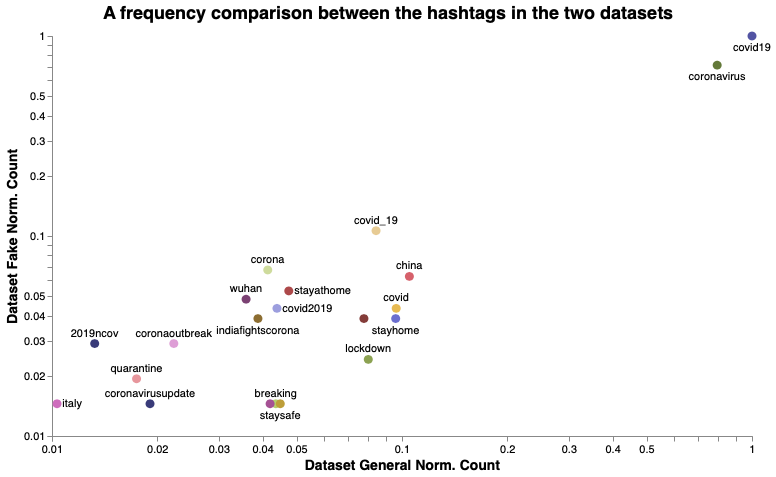

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAEAM0VwAjgzjioAT21Q2CHEmVjx2pnEwB3OKe3042mEggsJDIIbRonH283Nm1ZJEwA1whpEDtZWXCyNAEZNxpZejQAdgAGEpl4GjIsNAAWMpkkBkw2CBoALzg0VKRZFLiEtABtUHEkBC70NgZFAH0BlBliJAAbE2TUEZAACQCgrPQAJhKARgBOMzZiFIBxUzhFVe0AYSv8tBLKU4BmQ9rDgAcZ3qAgAbADakUBLVQTIAGJIADWvlexHeqE+JUBZwBAgEJSKf1B3yK4JOhwAvlJQLtAgkDiBEeI2G5zNNFLokFBMMkZHdxA8nqj0eUQAjkS83n0MV8SmdQaCTgDvgIirUAUUzodDkUqTS9vTutY0bJzrd7o8VpKTWgTvCkSipba9TsDcFughoMdjuaBZbrSLZSdFbUcaUAacSt8VWd7RLhdLMXKFUqVWqNVqdS7aftuqsyA8aIsQPzBVaEx9ZVHtWczmrg1iSqCikqcmKHQHE18TrVQzqBN9QYdvkqIU3s26GRB7NArodfWXO5XI6dDmdzkCFfUAYdYe3406ZWV5Yrlar1Zrtbrqa66e70PBVvRoopkYpeSWLULD0mm7UBLW6q-CUtQnN8tQknGjo2keyanmmF6Zte+p3lOCTmDANhdHyX7lj+XxnAB3xYr8eIAmBhG1FBS5Ht8AKgpC4FroRwZnCUAITqhRpSscZo4X634wZiEFaqS6qqgC5FgUU1EVkeEGQjuoLsaChGggIhzBpxuboPISDiLMgDkYIAImCAKRggCiYIZgCMYIZgBUYAu-pyaK4rQYGx4pme6aXlmN45oa6CYHAKz6RQYy6FUWCzooEjFqWjn4WU1bMfWynHM2rayQlIHKnKJxFBqImKiq2n+SAigMBAbT6Q5glue5QKZuqTa8XimVCbKQG5flarfPKYECCV94gMINCIpkcBuEgHh5AKlA1XhQltXVJ6pueGZXoNDLWNFYxIOESDtAwNArKNsW4TRzkdk5sorZ5iEbb5k7cTtSBouVH5xbVXaahp5zEju-xAqBS3fT2dYCBC0InM1HGPVx6DCOMCAMPpsiInsCA0Io80XVWvzJaBqVNi2uIg8u2XEeu3WFf1m3dEw9jjAwKzBTjTlk7BnVUwVvVFQNcM6SAKxsFAiKyCykj8Yu13sZG0YAXlI67oqHOYn8JzQhDZwkhuxOgnT6DC6L4tuOI3xs1lyYNdqTVDqcrX7q5XZlFzeU831xUC6VTDvRAQUfed7OO7j7nwWt3nIbegsuCstAMAgFvtYl+O1iljbpaTwcy3Bq1eUhBsYK0OB0Ksid1ecJI4r2fV-FGdpZ1lrvU7ztNe0NeQrBMAcCQtIqqx1OXcz1Hv8yhgviDMftl87pza5qEKhoqtcjv3LuD27w98wX-jiBk4g77IeT0AwoVxNPHyrxTXXu1vbcMifqNnT3IdYrucrkeumm9qUOqX03N+tzHt7GYDBd40HPrBJKqdCbpxJm2FyId1aayBDrHEesC7InEOYJ+0ssoV3ntXJe9QV4NyTjnO660fJAKGkwBgwh460MeBA38Kc6wwLSnAv+69m4jwLj7OASJMjMK+BBZSMIBAnGDDqNiMlSFuR7H2KEg5hyjnqPrO+3RHiMBWLIeOeBkD+EeHSJhUt4qLTkTPf+m9AFR1KroYWygz6mK+uTVhacOFKi4ZTDeNNPbUIZAYE6cBdDMkwAYNgOBTDMMvrdBClDI5+SGvYtgjimgClsMLcwExxCYGEcnGsbCGweMzgg7OVjfGj1sUNAwOTAk0GCXksobj2HEwyhY8m5SW5+KqQyZA4gcBsEwpLT8z8g6lMbtwgB3TEkMiCqsHA-hontM5pM6x0ynq6SLIoBAbAlnjLIZ03hGj0CcmRHsq6CVCQwhJGSDWwJjjfALqc+4bhu64LIRDCiA51TKkJHKb4-cwIgXAvlN+9E1KVJmd0CAZBFAwHCBkHBZi+7LKTIc2+-j6aCkwMzJAXIpR8RGe8lF+zloeTiRHAuyAICImmCsbCRLkWJi8dfNZkKNkgG2jFPJoFwKDlUocfEDE9ykuds2YkgJ8RIP-ECJ5DoBSvNWA8XJzje4zz-ABYEypji8ogrI0Vy5sS4nxFc4kpJyKUmOYyAlZxzkHjIbE8O+crUowZZ9NV5Ngxgw1LLaG8tYyou7NXfsyiRySTUQXLlYxZgQHEDQUWdqnbk0dXnB6mL0DMgZsIRArRgpkBRooRFiaX7opsVC9Axp8j6HyEgcwxaymrIqXw4WNgXCKCyKqi6LKh5NqtSFelfs62drGRcg5jaunsvhiAfI3oSj1omd4nhGKendHCNYCYABuedY7F1TMnYLXRDNwHDqymuJsdZmy9iVGI9S3afEToLgios4Vqg8ijUilxtENQAXBLWG2EYhyrzogxIoTFawSNUuxAuEB0LTl0G6wOCVeybgYuxXcGpowQlXgo0SA4hxhrHOo9NnKpQAFpCXupfhqwC2qQJgT1avBSoLlLgrBL9IjK6K02tcPCiJRZt3yO1sOdKoYoSQ1qAXBVugUnIBOpgIdjLP2XXtXVUt6yp370RLMBVbymXkygYUomGd4GjtU+Oo5xHlj0p2QJyx5nl3lpAJyY6cBZAwfiAh0ZP471LrLRyytshAA-DBRxDSdCLaxIoKz5vVoQxPJU6tNnGMACJWIUE9SdoY4nOOSBRP8ISHDi2HVNVCkv5o87Jj9HqMQ+b3QXGYBYcmNMFcqOsQnyLqRJCZlTM8U33RK45tw-hQONIM+41pJTTN2d3WyjBWFAj4peo08k64cQnm3OhtUq9VR1mhjhkNQ4JNWuQHECg0B7C2cNaBZBc9dbisjVKFJoV426aUzVmbfbq1QEqyWjca20PglA1RQNs9fiDhbKJiG-5DvEfzQ8R41halICCgF84c10sksmx0+zfmp3UsRC9qrSYiqqXxGxESOpb3A6vj2h9VqFAJDehVYWAyxATAu-JbH6nx4siWyGMMvqowxje724j77wjSagGQNHinCfC9p8R+QKx4WNLVNiEE4JISawK1TtT+7SrvoYDgAYChwhPu+9nL1oYfURj9ULqnvX4n3ZNOcM3KuoT4KrovckQODVHmlVrVBAHSTQZaDgAL7PMQV2E+D8G4m+G9ALO+CPN14vFYSf5p06PnbykFc0opjGQVKRUhCzSHHHMZAMNyZPodc59fT1OgLswQteaThCYiw4ovkRiyqQFMMQfR+9QXDIOBhbIAmIoKARZY6YGl5Rkd3WsfTZF0l13WflxKlA3RfEy3fvNkK7Xx3Vq4jRDYBkH2SB4UJzX9V+3qe68YMZrAY9MuqPymtn8ADLUutJpWUv+XSXj82BT9q9qd70LMkt+FBFxAyAdNGk6IoQ38-0P9mpsNg0lF8NVFxwrVHhkBEQHAYAxgQDdcH8n980nEX958f80VOc9choAhERBtdlr8WECkxtjM5dwDHN6UGZmRhk588E1xd9UMlICpUDFE8MVFw0sDiMaBaEcBop4M+DQsMcF9f9WVl8Bs6AYA2dmCgw+drc5Y7dfdqC-9OCM8XpGcxBmhIDEQ8kih8p-gSRCRlIst1wgN6JGJ-hwNWIoMrVi4mBORuRYA4AE1dD8kCYilxtv8Q5tsWxTg0CJDockskBdAcARsGJNUgIdV6NIJb8it78rV3NsF6AsIeV0xmp7Z8R4CRVMcjwBwewa87ozgnd8gXdAlUY4DWCWkM4OCHN-NGZlgxgyA2AmB6lFBmQMhMY2gJBq89t0DJDCNJMmAoARtEDGpP9KjeicdBZVhZCkAGYiCaCC5EZRZkBDjTC+iG94VCDdDoZRNuiSYe9gchwbchMwcwZg8rUBAyB31LDzj1D-9HMDABlFBAoUdbVmCtiudSocUAAPOwcQWfZQ5lHXI4q1cE2YBAWE-4mnMwhvG1acRpUCVbLcf7DDH3WopMB3SlPtelUE9I-8GjYCXVXI4w7sN4kTWPKHSTPjFYyE4HKPd4iHOPbAkI1YFYHEsAy4wWEaBABAcwMaOUoKE6UgfQGweFQIaYKeMIppLoyI9g1Ei47YuxLkTAYI0IigvBfQ8MQwgCffChGk4jIo8XGTVzBkzI2jFk-VSkgeI06EoaT0EfAnLtQ0gEvEwWPIZQV9EbPPIzThUM3E6U0qOIbBcIQKcY+IdQVYeQOZUweDRQRQBTfg8xNkteP02ghkHTGgaAGgWspElvFQqglPfIw-YjTkP2E6NtNtBIPofk0s8hClZ1J0r7BAeQTGPky0shUbB4tpfs4gq1YY0gcYyfTGMYCUvsn0sssMpMoaRch4cQbJTALdDc1Qkw7c40oaOwacMfVoSU3zf0yshgAAR7gBfPaHkAZhWCYDYHN28wTKlIvIZDsFFjdJPKbK3MTMAu6DRGWAUDsCfPrOJRRLnLROI2EBwAQERBVUnMbJLVQqSwSHEHaH0iLEN2N2DMoLwvLJDwiRgyqDOLAqovPIfO6E6GijorIAYpwuQs3NAPvIrM0SgHEEeAyDYFMC+2nARzUGGPXO4ovn-P4oLjqQaR1OnP1PjJQuoqtURAYEmjoF529RtNtztLyIP0dKS3gELRoDlNAToCLORM9UEJJOEI2wpNPN9OYoEvQGBJSUCjYHCkn1LkYobS0uI2-JVP41UtjNgVnN4vnOIzBKOnFgmCgBMF7Lkpv00s8p5LcENxaDZAYDvNqytRjjYASFnERxFhSRiksMQr00yrivwsc2MEZhyXCE8yQvXzVFAnohAnUkkReOww5JjzE25KtVyp3jyRVFxB1DAjdjXH-ChEYyao5SGV0SMRjL1LjNivcogoApYu8vGCQAWVaF-KnIyKZOyL5W9N2r4uKtF2qrGEsMJJ1IjDVG1mhDKAgx+ntMHMS0czxUxlfEmqiq2piom1uviqSwwq+wMAostjWP-QqI1miJCuyqOwv0ZmMTOtU1+nlDoj+DVxKFRoXXRuI2ClWDaGgJgFgF6FkEWWCtJsgoOpI2dzOARLHPjUaTJ16gp3EnynIihK8pAE1LcCKve2HPgGgKiUZp3TJoIrYALB8EUA8HlXhpLN4upKHKSwCzgw6vqpYIiO2ohvAoHIS36w5TEECpWD9lSuUHk02qNvBpJrluZuFoWWrOuI7QysNugXUp2vArmIkIIwjW0oOixhChxp4shpWqnQCGvKawhl6k1F+HawHCWoUvuqSxgwiSYGFhhWYDbTGEPKVXVtwrRrdqpV6EcXdMuro2uqFp5P8HMBH30iYHFo0P82UBAuwuLPLmtIF39V+vNvr0Fjx0aQuq1WZJyJqNuq1v+v8xgAcEwGpUdr9uNpdrM1CogOCX0ijvkqysrpKseF3mLoUA7sBI5XCgeCgH1te0zoluzrsHCCJKEPWwB3AiGtB05NGuhCpSqBPswGCm-JmAeDLpnh32cvftEIfs7qnRasAfargFhMCl3lczqvvsPv2uFuPyUIbOjtNqhuaoLX0jUEuDQcr0wnAYPsau3sczRDYHpTMCLA8BgzAYvvDP1xtTjUT0ip9tlGbB3GBFVEHAUmhgBEbqtQSDfDgokDaFGLk3svwfJm1BcI-hy2-ixBusDoSNDUwLL0to8HkDwc6tgkgZQ2gc21gcvtx1c3jXargLxDXBbFVCHB1F6ijEkYerZqaGodgmhDYjUgJGHAkX+HriwcUvRMeteixgql8bCV2P3tghVA0h21cavA8YBWsc4boN0GwS+xZlvtqTvtl2yZ3IZHoAMF6CazYlUlJG6uvT6s3udkFJ-shz-qkfKlsAgGzVWC1P8pGKOo4fKe6EGeQAoECiWznk9xrmIXCdoflsc3GaScjycosbJNAy8aS3Rm9r7pnngJ-Xf1tm1wiazsc2k1hNgJ1Oi0InAkkhJGOG1i2fLxUA5HlQmmnDpN7ocoapjroctoRM9rXsM2dueY5R8vpNUsRuQLthRuHrTyrp6feFlq3sWY5XFmgOUGGagofFIZifemxZZqKMwi7leiChoFID8bVjxGDB+nojBGjAJDcsIdju53fVoXzowdKf7PnotqnRVsflrqnquoYzKZxcZD2OxhRamzRfxLZpgMJeFpgFkHkNvOlcX1lcFitqnwyHc2YegJ5Tfo2c-oFN0YwKkIMY0zKue1jS5ZDNOcfscz1qaBaB2RaClZ9rBanWWCgEnwFCpdlDPTqcvR6pvWaY1aPuIzYHaAkDgEwnpUVYLgGWCkUGIF8uQcTatWjdjczYesiXGPjTiZXqLkspKftYWcjZ1vEByQln8BZiWzWb+xEKsYdbgYjP8EwAAHJ5scBIk40DX1W1DK3HN8oShxhc2ksJAJBmRmAglHgryJ3mr9IZidSPcF5Zm64vXBYoBopTZgW2CNLNyg69GLW+FlBoDZgBkcBcU1AJApLoovzjpZK9maG-nNXSofW-WFAXxbCdTorikt3Spi4VnAOhogkA2yhzGm3XLQOGRjrW6Koy3KLs5eXR6YTypRYIPdSnbilw2h3sGC52RTBtTPXTKHTtanWSKEhCyQDUOC4EnxAIAQTAoIAxz7AvtmHz7B2zzh3+iCyxiIA7XkOmaCP0TXAr9SPW2bHBZopegGOmPfLF2OUwkGAQKPWX3fmWX-mp1IlyWB3JOK3ROZCeRwh2QD4sPqNhX67RWpOcmGRJoHA7B6BqpuOPLeOp0mBzBUqWYQOxWWaEBcAlOp0aBwoeQIBQEUygvBYwlrLTBvnlHNOmL3Pt3riFAkOsoNRHn29SJPlmWX46OjsBBBOouuGMySuhpmQBXzBlAyqqXYPuhLhiBeIIT+Hjx+UtQhVGStU8uZZj3zXFiomLDYmqbV9Wu1Ljb4WCiwq4BYn4vTHfxJ6sjrPWTDPIniNx9kRn2fnfaQXcP6uTllVjoOhMyV2DO33kvSoaaYAHE2BjAHHXO9q1vkj2gtDop5S-XaO79WydbomyKPMqai1V2B6bdBcTKeWvvzLHN30jYxYJZGlMv-lIsyIex9vUhQF0uyFLd+cQeh6-Phb+24BDhmRTuNPlMtP32hpAp6V11kYyHdntvUfZMHOMe6pLOluvTUfJ821wTyu0IBFZAlH5vUfTBiBBeDa8Ywa9u8f6OZhkQxelNA3amL0GnerxFUf5C4BSAckeeHu7rHW+PyqeHCx9I6vperV9Amh0rSeqxoXjnNizenSZpZAE3deiHlPrKmCzvyeLuhpvi4Dv1bfP9JvvvHMIk4vuBWhjAuOvekujOICaBDFHxUtlW4BVBeejQAg1AfPgo+lab0-0AaA-grmY+K64-zmsZ3Mvm3BsTXfWXvZ2BJ95BTfbORn0BvyWeCHY+nvzn44qgPN8+QBBs6A42tTU+4aIAfZ6lwp9PSfUeVPbANfKoEddAhX2ecjtGu+zmr7wgtMKAEAmBtMd5n9Z+HektgpMIDAms35XCNHIQtHOfGHW1PeT+W-xWIBlBgpxB0YxgsYTp-WB+XSNfEviJ274cp-YLnYAa7TL4coFGrgVwNDDKCRIxAzfI9mawWKh1iMM7fAqjAniglQGA-PpEx2Cim5oC4QAQC+DcwD8DA35MqrCROCzBZ0BlK3EZVB4BpX+LNHwMFBgz7sZyJtTfvr3xJDd3oHNRAFzTCJ-BoQo7QcHlFVDQxZ6ptArut3sDqdtugbJOq1lTrBh06eHKkhDwo4cpVamCAfjAHMCyBoosJLztd2qp3cBQE9MCCTjlDApRIlOcHi2Uh6rVTB5grzjdxsEd99MgfZGg7HYHC0sYwJaKLoi570oX0oDE4AP3kDbQTuJjcXuEXXqgtT+jmWgP0gH4G4jc-fHUsTkIiODycpIHQW52gFToIAk0GDP4CYCGJ4gTA7HraTYGrct+U6F8DoiT70BIuOpVRu-Gyxfw7+v8dIatSLglwTo8GLii-xaECDBYIXRAEjjhqYAAAX0Jz-LBDI09gPgDRwe59d0B0hJLFHxzJmBEgPA-2nwN67DUPi7TJIlD1kJlgQigwWvtpwPRTtMAnIetk8Ip6VkoAsgCctb0SiLdPS6-VHobjsAUBwgMGZ5MXymHndyhgsJkCyB8CBEeQqxX9OsUCGlD4i4hE9gN2IyuZVOmZaAggEmhjAzAyuT4T7yApIgB+KpPwf41DBygwQwTFUD2E0io9oRqg04MDyaGc8d4AoLbglzJ78C22pUewOYB0y0jlWA-OwGND1Zu4JE0zddkQmD7uC2hKSHRByMFFVhAR09BusMKnTZsyq1wCkXCNFG7xooyLSAai0pHdBBs8QacL2wbYrZ1mzbHrglFaYjVrhfCZmDLStHOx-cKCFsGgjuxWoY2NgJ0Ua1dGo8c6OADlmqz9HLg3au4CGDlVrSfc3B+gqdAVUUB4BLBj-WgNwJNGgDcce0acEdVhSyF5e3LaYSKIDKoxJoA-Z5CaDgDP8Ge+o2YUnlBo4coiKozMduylDKVwonYhMbBEUHZ1XA8cQUN+QF5lZC02Qm1NYFHyjFfO6wqJiaBY508B+VQkwWZ1RhYc3qoYFUPUGJq0tCIvYheoIJqrDdpgNhVfkCL1GriHqL0AZIuJbokd-hq4Z0dBwBxuioBxYsehCKoDSiHgSwmDAAEOJ49OIxMuxQFz09BF4-sUIKZwixYee7MIsZSphKwUwmIvXrWIZBm4xg2yKsS-DXaEJvcm7Mjn9T5aCwMKsgTUUL3bH64Zg8GXKrkJY4D8dM7w2Cd71NEVcJoOAAUPHAkB8MYRPE-8aVAVS-FhuqIo5hsThaMSkkQBFVoKyLGtDEJV496NMEwA2FRuH45rMnTaxaDOsvI1GH3zhSnCN67IuAAwERAAA3lmEkMwY1jpO+uR-AEAH5FFAoxHWtCuOcl2dug5gARBPhEltjHxSWBAAAEvYS8aVoIwxrQ1cB+IRFkO5N15jjHM1lSqIjBOizgCBVQK4LlPpT09BRjPZBjFMTotYU6gIIyRnTCmOZbKgUNzAkBY571xY84l6Km2kn5DQUwjUDAxHAjiNzx1E-XFYOii+CIxUDDZr+LJQZiEJpXDSRVAt5mA6RQo0vuJL4mmwZMQVMbljwMIYTox8AeIfkGj6iThRLkoaIiAumMDUp8EoaWB32L6R0Yaga9gJAH5kVog2SCADshyQwArpI4njrxPwluA3AsgX6SdNWlqTSormGwFFIslpDapHKeDsFAqixSTocQBKTsMuHCkxqxGNkBMCMBpUxKxwl6n9K+DAZPCzECDGxFhhOl4gMwboWNzZ73ibOfk1viADjS30mwA-RGb41OpxpqOxE4Tn+Ihl0Fe2SMq2owweEUtlpYhXDDiIwFJYHOwQPaIx0wB-EoWaIpGrCyCGa0bpaHIaNq1WBw0BkjHfYkdwdqqSZhpUDwHDWrJzcDaqPeNFkmP6cjPxkYmDgpIqawlCpy0iXt2INLwyKhsGFIsEje5dN2Q3E06f5ICg7x8cd43UczLgkzTbpFTUBMLDqEKd5GLvEmY92FloRa0etE+FM0rhKjyJJCVwWZT7HJl+ecckVit1hFrSKm8AYKBuNhlS8A5gsIoPROSEg4CEXuZePM0TkVzZp+stgOYAqgFp2AXM9tHF1MBpIa0qwjWoPPI7DzKyrQBJnEGRgRzwZlsoaFJPei6TORrIyRJJGJAgRAmYIAeQoN1kYIc082d9DSJQkmxxAmkIknjX+iE0gYxNVHjDyfkHytRkHRUWRP7mo9AAQnCAAQOEADkcIABY4QAChwwWFrmDJAG5zbRmEPJCjSjAB8NZH+QaXrK2hMByGCTKqhYQAC3BLC2XhIa72AxgUAfBQPx8DJt400sj2d0CHHBIIo6ZVuT2OYUF8EgKwAWe6NYGKxyQ2EmWftj2GWtBYwsXeCTxdkBNGRykQkCyLCYgjiZ-wyRIUJ5rOD+aqPRabfVfoTTm2JrduZdweBiVKoa6Y6r5PrnIL0AfsDqbfT9jRSWgW8pBTvKnB7Q-+IQd1kwuMV0E2gEwCAYgqFluKjQhiOyrMDanzSqaqil2UG2V5XpVeLglmeKzNwvpIoe8iqI0jkVBNFFoTNkdwpAAVZlAKzX2akLbnJKWavbH2WUHsIKji5QCqaTKxtEF9xA9iEwERRKWJQAhWsnCWlP8y-CJ6XXNfnynkGRzWZaZB4PmRkX-zsOZSrhb4q2jMBOlr8NRv0Nyz39TW2I-rvLKh5LKFAnzBgFb1CkVLhaXEnxScrPYCIxo0BBmEcuKkFKMlEAYgBAFmC1CkQKI8hWdIZAUB44zQExNnNwlfLNENgEilYrEk2LrUL0KaMN0QDzi2asAThf7IuVrjWiZwXRdUtmW7d5lyK4jI8ERjVD9IswWmo8C0z+BnZ9yhZRn3P4pJHgC88uq4ooXoA4KSAJ8mCrGXitHlf3diehLYhggIQUIf8JpHlCNKI2AM7oIjByRchmJE0Iub3I3ZlydZSc3BdxBNBN4zgf8+boG2v7qMBhP8DftvMZWs1UVWk28au0bakkoxmy2Wdsv2GOZ8ZrmY0QCr6UN5ZOagZZYzPjl1zwVISplfYHoAtUzkPQ9QZVLTrGSCl8hWtNJgnyuqQpFKnFQRXpwbiW5qlHUbXP1UMqgVAUKAsMUuCLYU1QypmV6vZUs0JA8cWEjrwBVu8p0l+UjJZVIz6VPlUc5LH6p0kz9jl1in1RgF6DsBdiA-RGOjFBLur-22KjtYaoRSxsqo40l0e7MpXoAyCKgXoA2MbWszNeJcZHNEzVmVq6+506JtCrIVbrnhkMlBmulvbCU4AMcE6NMoYmzrho8cAxMjAZgkqPJR0RvuetbTsNl14rGgZ0EiTpA6SLi4JYarMHmBRihiGkTQGMApJVW8KUYqeo4lMBwubE46S7I9VproxOKdup+pZptKiSJc-uTUpqnxrKOw4j8Sk2cYaxSQGTNiFkxvXj4LOqa5bumsA2ZqQAedBFP6xeWzAIlWG4WhMF0Rxo8gvooJdNKHnJy8wGUqgXBQeFTrvxMDG9TuyKAACUk9OEWAEDZUGqWNWMasuctHUsbMYcmMUTXMY1f0B8WMjpt41RVwVEVh7XTU2o45ijqyn-SgTxpaIgzZ4Gq7ud9UIj0tiQxEQjbZtZnPJtMHzLcZ4HRiT41AnQREtkPGCmKr13cq2EgTt7ySb1GQDIHDiQBaSuZZpdTRmqbUABnsgMQOqBjAYAEUrGAImrazE0BIdW1ZbTCSmAyAPgb6bPLg3XSlV0GRhulpUFxqAtb-DxSkkSmkCBQDwZ9b20U5A9DKg9IwkRstoPA0Qei9raJuVW2KQiMwOylGocVUCKok6nUuqAaV1wCNOEqtZIpFgD90YgQIGp0T9kkw5+0BJrZErGAmqqmv7VrtqEBDghNIpQaELuGmqrwjUeIYJtcnNTkhXN7AD5WNxubfJ7mfyJ5gUqKLxASWCgMlrSKw7ZKmRuSo+SZOgKowL1fa8ldetm1x0nypazXow1AT2A6VnfDTU2tZxraGYVO-TMOqRV9aWaO7BgO0GiiIxGdiXGnazLcAOBkQiuelNZRLinqAN1osVegHoJpdbA4SONI9vxYVRaaLMRrXAB50rS8trMzlUhrQW8qNcAqt+SKqPC7DatEirhmzTT4uaUVpoM4FiThUzp3NvC2NYTtZ3C1HlCJI6hrof5ISmOpgTmrluY1NrrJ0USJNdrmU9Fw1Ns4xnbKclu6k20UBxRZ2Z02bvVhq8EsypuIMyU9AdfLtfKkbXcB+tAelDyERjo9k9kvEdWnpY2mk4ApQaUfYGrIyaLVM6onTJ3fAS6mlUukAC0BraK44xDu23ZgmwQySktck7WUvKokrajVtu+QN7vh1NTLKqwPeqetWDz6b1+Ir7Keun76RJ8godfW3uTLVkoAxA8fAfvj2ikm+VQONFtOE1d6G53Qa9mxuCJPgYAgyj0p6tGUod89xGA+NuKESTbmB02sHofqGjINUG0xRydWIv0Wa94gPBmd0q-zfzR5T4fhYvOr1Nq8g8GaUaAn7W0pLCeVHTRgdZnXsyGHkkctZtz187xWGFMSvQHYDAdKD5wrXeKyMb+sUyeQVjuGJ6FK96mCSsNpzy5ABARiIlQbdbqdIRd85AyIBuwriEKkmDx27dVtClAxjKhWhHQk6p-0-dfdyI+jQWs9VMbJdD+gvsQAgk5r2gYE9oB5LKqFU-2leyPaWQDE3ZgxnxYjPEFQZtbs99h1PcWuFoTVd9G6mgJkrNVfiW9P41Hv4bJH7QjNHPApZEYEnWSvpLu7uXEQAgQQNYEgxSE2FEXzEzdBcSI4oR+JS0ipru4g+K023BJXAa+jyf4HgCmAGY1QVVsmoZkMbYj5c5eWJtsW1HPA4gBo2-sAONC9pDywI+9CqbBFWOQUckdtPNUuVwjlEkevkawjMhdA82Oo70eCD9GD1Xw+mFUFbUlGEtOe5g0HtZkVZzAu2sbr0Jv66qNlN6qNZrweCWDjody0o74YLjGBshUANIuhMFSIHTgqPKzOJWSNx6yjbOuytYFAST4baiuywsdhrpLaOj0+x5cyp60vHqDbOkY4hyY570FDOC+7L7qs1diI9Ph7-R1sKIPBlxOJgpS6UeXzjZAbNTPYHqMMQqpJtumpuej4Ohsmm6GqpquX2MK9IOMxyxsbv+nGGhYraewALw8mEVD4WhMYWgfpXHGOVKScWMsAH5shyWwgRhtUfEPZ1QRvlAA1seaVCxGYMbS4OfpBPC0U2B0fLTkmIDmnXjVqRgG1TbW9aLTSbQSUkeWVQcwjcm0A1tFkBlZsEWeu-aKtFORGaT6EiEOIw0gtgRw3Ur-SwZZqRHntVyq-qss-jrKhh8mjE1wGiNdShGi1URv1PYg+6p2SurDqRL7lzNheWvTALxBiPAj5jCLEquwFVrGyGzD4v090C5XIaZlqG4zcMfxMVnBTk09kVcHXW+62TwbFXgIYKUi8jprY10w6adJYQo1vC3hbWnkCIpPDIZ-DqKagDQAQiA-QAAWKgAAadAAo66AAl6wH6ABV0EACboIAAvQG84AEPQAfoABV5wADodgADIbAAKD2AAXccAA37YABKhgfoAGaGQALcMgAKYZAAZQyAAShkADXDIAE6GAfoAC4QQAHwggAARA0LgAXhBAADCCAAmEEAAcIBhcADCIIAEEQSTTnQMA+A02kzHU45jzpchEQGpd1lkgkBpZtp3IoY6lo8XmAgkj2qJR2YTlunBuUSlThxb0nBrDJHWfzSJdFzXFyz3NJwXzVxAC1L5y5pLIABE4CBYAGI4QAIxwgAKjhwFICnS4AEw4QAExwBl8y4ACI4QAHhwel0y4AAw4QABxwgAGThAAwnCABqOEACEcIAAk4ZrpSezPEBm8qJrKM6oPQ2TQEnFB4KvXosGCAgdgAZGzXTHLa6suuvbW7I-rCmyh+5nM-abRPu72LcXCACFftkFLOh8KXs6FcVMs14Ur6TCCfEihtTkrIRzK76ZgMr5bAvlUhs+t3i1oSijViHaRswWySUCTZqbtDUcQYr+zbRrs7YskNsWC2LpzVQKdCOzH2rclg4SQ2dOp91RqmvhZ3tDMQqhi17FE2Vdo12MCmsqmZkQgonybNhugZmB5uBMaWoeUocHfounVZXUeTpunr3pcBchNju5kUxCqaP04hLRagqwXE3UfjVcn8vlZrkFXfzyA-uivTdqoOJmcGFLI6Z5zYqLnqrTJztc9MRiYaLj2qtZZoyzNzXUgjDNYDuZQ2HHFDh63eTmbGFFh8rmNvhA8D3743zr1NpchhAlPZDbKt+9tZta4L1I201WrZeIu3j2Blgc4wk1ipZ3i2YB7AYWLQAKbM9OQl-OK1OlhRVHj4vR7m6PvRE9L2RxoUGQze8MY2arSrFLPQCjXikpz8Szk2rwKXz9Yx62+ZHQDRtEnbbhN9PWvOsAQ3DD9+iFS4GwDkmHpBpj8eNzhmUkC4sKPcVqe2Sm5kYEnOO4zdVhV1kQWheDqYCPg7jbD20wBVWbuuJ3xqDwUBPQb9vK3iTP4KlHI3TK-WHg7Q54wcZttHGRQj6W+t+XGLTXs7qKQjoiBoHj5ArldyzNzeOgT3TyQ+VdZ3FrQ7tzAAgWe1QXntohF7XnbYV4fRvd3EwQ+BAFAFXtK2D2Adg+0fiPtr2Lo9HeAG9EyFjQWYmQJcsXuvtOQnkJ9RbX9P-pAC47vxlLZPYVnnrwucpBtS0f0Nobh7Be5fU5xMFohEY8piBlxdYE52MabDd8ElN3gtpXtWdruzoL4RVAZ7rVgxa3rntoOOFOpOG8CGJoG6tcqDp0tKaLsrBHghgCrY9YLBVXO7e9-ByVSeuYwh1eD+h-H2loCI6eurZU6NtPu8CeHYVcaKI9jvW3uHQjgbCkkRBqkEASO9-XXRZIJmhIhHcQH-zgCamENod5RzAP3KS32Kb9xu+iX8BVLVd-ulJH7AgBBm+ThOG3lguS0T717fhQxMgFhqD3BHUD4jKqwNvmLSA9UxB0zqCfGEC4awQiQqkCnnZiHX1jazffGoMAd4CRoSTfojx4nBL3HKlCBoscqad7uDpR8E6SyMcBdKx6x3o4XLIAfAtAXQG8KCl1Oe7tJYxt3UMTObwHH+yB7E4L1VMO7L19+wXurLVl5SUTyBEPcGfEZXkmdxR-7f3sfAC4SOYGfYBwdLP67591Z32hlVSOzhMjpLLUEADwf4AGOCAQBc-acX31uT10gM3vWsttAHjmQKOMEiR0WEDnj8fcc8cwVWAneSNcLzTEiqXJIkiQcGY6uI7R40z9KA1RlaONm5n4UiQCmTzqK067Z9lZxiE6177zZu95Z7845ThA0Qmcmbg5P2U3O9nuKlLMMVkCzBqy9L1pTJlNuaykDlTxzLCRMDRTMtlL7F7Y7zPf26cwxNdJVZX6HPLJ7LjlIRMnzmK6KURlSvi52dYuSgIeWtEjpHwCJ3x2zzF4S6nSe3rKkSQG4eV5cquXUfM1zO5m5WcWptOPGbWQ5hwxX9I0z6ggdpHBHbIXgsEPWHzyeOmHbQNsW+k-ksSz0HjDE108joAcbHnQpj1yYtf3OvFe7JkNo03dtIvHMYwHFJaCT4KO+zszl59v0wAcahxhYxVzq5jdDQKrYJf1zMoOaIGy39nZUpG56Hk2MzlNsO1S6Sw2T4eBkzQTJZhASNJXU6fQJ4CelhvzedAemeU4Jd1vugFV6riERUCcP+TmK0twO8FiuofXv+oKZgF1aavprCLzs-a4IrrAUyI78VwncPevOqmK9OLlG9HOrvSoZwfFZyDTbrbPnk7pV7q52KpZOJppc0ls5mX6SNBVUmS5+9FGpsMX0j6d+gHGbxpZgDVs60u-jvlKL3ynFBrMERgIk4PZVeYOeuaCjuHqOSG9-mv6cDnU3HKHZLAOut4bqz97oaE3ywoRJ8PBFO+-UjFrEftHiLvN-iTYDXKyARduwA4CY8vNY0cAPix0XY9WdZrKHwOfYAc4Vmy78q9S2M4VwMIs577ld2R71efNdiUZAnVw6ne0eGQsovQyR6k8+OEqzyndj0aE8IyWYJDNELvBs9x1goywUaDXbsczAcCLaJzxGXpyJWUYpjwz90AawiwjpgXzT+215ujObHuK-BfG5SEfuoPIACqOKNj3uOEvGnrj9u0eDtB4vZQfd8JcDdJYHP9Ic9cEAg9HOkvJX4IKn0niBOKnEXj9mmRq+nXnHPnmEo+DapR9mQx2dr0NGq8FgD4DRvrxU08A4ArbObmJ1l5NI21BQYes98h-M-Q0RYYgEbzO9GG8KN3SWIdxisONJfpwpAWTKYDq-hfpv+sslkd9wFteFvVeor45nQoIAJvK15d5B6C-oBVaNSeIFF-S-5eIHpHs72hB2iJ4WgStSymgqBQMiclITDWEl8fW30pF7qgr5DZi-begC2k52zwcTczmuTb3wfuEH7acUljaXqjLm+k80T6UAZ6a--e8d3fwWU0F2xyeTdJKyfVsjwOVO7fAftBSXwAKETgAAGbAAie2zBAAFquAANutmCAAPGsAAto4AAgawADE1a39AHz9mCABBmsAALo7MEAAR44ABFx+Xzd5Vu0+p0fPwAD6dswQAP-dkvhXz0FfDThzRR5iT8MsK-KfkiMBRIbe8tWNeaE9OTkIRPlJpm+hLbwYW275cyFHwg6hzr04-H7by7brgkLJYN+SLiATAL4yW9e8e+qRZAWErCTRC1lLfYIp7-p8S+4+rydgNYIs8m8NeAfDXP5fUhyQwZx+lv8Lu5n2gKM7K7PoD6Grj9O+MhrgFoAiNZDshUqOdOjRO+1ep-K-73z2rTWJ-ZwkPt3rv-Vr9UGBEQxcWGiM5++z-9f8-6tY1f7tuOSfU3ln9Uhpen56XLyl0tslpeW+-+Qul+vb8LVB-TXbhiqAkxOj7EKoMAVhRV4ldp-oUYS0gWdnPY9-Gf1J8lvRzHRgiwTAHzRfWELjY8U-Sr1x8oAyfF0A3AH0D18G7epwSo8UOknKhVAdQHz9EPEAPj9vYEKAkAGYQilOxLfdsl4wVZPi3q8DPH-3QBVWCISAZ9if2Et9XAeNHgBsAELnsZvvffwr9D-WZDUBkQKOzhdgAg-1AD-MYhUwo4AREAikIAdoGIVMAeQPYC1AKPijtkARQCj5LfE-VNwCmGLkppTvQQNtEJlBD3X9CArfy1ZmQWALjskfB-3yNTAvWjxd1PMf2MDfVHMWsDLfVkF4IxgIKTwBNXCQFqBLfcWG5AnHUJGekn8G5XK9LfPGykUmtGKycCzjHFHS0v-c90kCp0PGxgxDlepEcA7aGpFVkuQL9i4B8RNT1H94AhgJAAkgPL0uMdVTM3sDCiTCEXdzAiQKID24JY3D0lXJL1OsNXBvxOgqld8CjV3pQJTKDv-cfxFo+g-NiUARYLgMt8ZKYxloR2gNikt9RiMgAWR7ASYRQ1qfUDwDIgoEBgHsWXGFjZcKgkvU+kHQOgCLsCqLwPHVXkRTTQDdnYPyqc96TGFmAlaPpkatKAgwBCCGAGwD4DxAgQPSDfPFYHXRXAFkFMDlg5HXgxwTEIEt8KWMVzgDRgtwKcx9oFmDy8N-dAI6c3DX1mVNMgFoHoVGGcwGTsFkS32aBk2IwIBDIZVXW98CfSgOblxjaf0tgLAlHydZZML8iqYYMVIMW9WgqkQHRrlS30eBwgb8leQaAWEjaAUbHMT5DQQcULuDlXKlGIApQvpw48D3ckOqR+reHGzdnvNEPuDH-Dtz5lzAb4DX94XP7zM8uQ4LzKpbgsbkFU-oAmkBhqHbYO+UzQ5EFT4mOfH0yABQi6VmCzQ9uxaAZgHQIUt15VzBSwGhXaRQdcff502EFgBv1hctvUPjDx4UHRESCG-Mlh8An8HRBqRLfZdiwQdkYI2tcgDW1xANEQuIB85ZwNwG-IzjMkJNCTkPFhcdpMMqk-IBRDUMZCMAqp3sRZ0ZfgeBxKVPnjRY5aULtCGuexF4V-3BsJaDLA0qEQ1yTFkBWBoQPkL2h5ADMnpty-egLGCi6HINRgP1Uu3qVo-JTyZCDBJYyjVlwkEJtkFWHsKS8xyD8jyExuAoVJxlLEoVh81g7ZGCC7wsvyHD-gisJABFyTAGMdLfa7nrCC-TL0RDjHJVEhZ4QtINfDjHMPgJ8OQuf23Cp0MCOT8XA8oLGDkGEfGU0IkZjnqkcgy329DlAW5WGCFwwvwqCDXARFgBPbPtj7tlBAZFsAWxcsJHChoSDTfdNg75wxEkvKYifwFXeCIRDlQ3pGCB40fYnHMMfYCM5CaIgJBQk62FYHwDmgl8KEi8wcfB4ii3ekIOQ2rQHCS9PbQFykse3dOn-AkvWlHkjWeRsIxCksfkKpokAcSP4DFw-8NMA40AMLsVKWSOwocBIqCKbDzmXQGilnlIKGvorg8QCLsHONMOPDcfeg1Fh6DaoEqgUdKWUgjN-aCN886JBQA4NqyZKmjCOUQAAmBj80AAdhcl9AAAobZgQAEXRoC0AAFsct8FUfuwMg6BTCJmA+ZQ3HTD4cPaC8DXMdg36sGrV9Cw5iSVJyUi-IrpnG9GwJzQgBUZKn0YjzbIvze5tNZECt17I8KMciEZGSI44IAOSOoiIo0qB2Z4o-lnCgDQv4LMjOI1dDKoslLvFuYfkB5n+QkvWsg2jfIioMrdmQDWzy9NFFSwkhBaXHzEA6bdQDCj0Q25ySxTAWkX6Qq3Z8NWjXwkKCChs0atnqQR-PCL-C1o9AFBAknDvWLg-o6AiLthiTAHND2IkCKki2+NHxC5mYGgQBiPo-CLGDAABLnAAf-bAAE5bAADXHZgQABE+wAAGFwAB-u2YEABOocAAAWsAARUdmBAAXYHAAH3HAAVNnAADVXAAF1XLfVX0AAazsF9AATBq-zQAHcawAATx2YD59AAH1GZosaJ05mAIAKtIbXHkVDD4OEDSxguhWtBoFlgoAi1dAY1wOBjWNJi2cVYAIAjEjGwdgK-JknEaMej23O1UtiVaLQh0xCwBQGbs-VR1XhjBI2aP1kEmQKDIA8vHaRYFceCoPXQPnOgClkJlJ+wawv7D8W9MnnYUyrpXwDgOWtPNU8Qhh1IXzQJBewtvnB0Qid6O7kagim0D8ugvx2WVLQ-GgBgiaLONSAS42+maAeIn8KXcC4gPz1Uug8IVU4V6TZyTiFYqci2DYfKoDIBvySqDAgVcG0PVx+VOhz8iIkIIKOixg8qkHDfw-WK+j-FYpSsMdSXuJuj8gemj9V-AJEFFs9YhCMRDAgeAB3hiKYKAbiJIz6MRiyoDGCOlpwPT0Q87A2H16BSwqaPVE5hPkNAQo1RYXKgxAhkOHCvYxuXncJ8UoL7NH4m6IGQXMEjRGCEYgBO6ABeT-mCCiwYM2gTPY2WIPQQiREHicEVGeILCn2XCIxigY18IF4ZuZOIID-4tBOTIc2HBINjhATBKll0wuv3jFbAo0M49EQiE3pRBiEfWoTXwscInwoNGWP0ju-CJDik1AA81z8RE57DsFBwDRWvDmfA2IjpDABnyTdElKuMxg-1TwEz4DgrxyrjfYIE2gMDYuJgWix6G+kCkRApuX55JHa2K1Dt4eOH0g4aAfyaDX8XqKOCxgpeiDDA4u1wNjEAZCMClgkE6FfRBdS325RuEq+MfVCycUiE0UEhyMESOUTUwmhwbEJNgS51QBnzQ5XS32zRKoIKE0CyDRJIoTKeeAHsQ9gARKej0pSiKNciPMm3TNb+FuNx9cCF2OyQ2AbTVz8aue2gwi7-AwyS8EcKPhzpwoPVg5Y+QkFWa1wDLpPWAdI9VD0iSk5TngBbaFF2YtjoFIgvwjEGtDziyEySKSSyoCcXGJkw3YjWD6I-eI4iiE4QHaBzYXJJiT9bAwHqNgoQwANtIk-ZJgS8kuDliFTkyZLjp5wZ5NtjYkkYiw4a3ZxOYilZIxO9h6cTBxsBApJcg8jqQlJ1k1nnREJw1CnPwl8ppMS9XRiF4g+INi-VIkPVlRrPqIqDGLUWFR1GnOyLUVVrTKyS9dAA4naSBnMYN6AmElDTATg4uowHs3hE6F-sok0aLOTAQr8hITu4-uiVjuLMYOvYqlIa1pSWEpUKITEAOLj0SnErFJcSCw8VLao8UZnkbcrEmUKPw5Ut1WrR-dPhWCC1U59GUBNUrzhsBkYPmTaTlUquJgBKhcLgoYnNBv3QhNHOFLCoDzTwPeSHghiwPN3WJ8JRSDkq+MGJwTMFNXYFPW6wVVEQn1OmAlyWNBZAqLR73NjnU7UKdZrA8ZlcwMWEyJWjMYxELf9EYdwDoB0yGnkic3fUh3kSdkS1zoDU0g2KN5ilXDVdcEBWpSS994fcSZYPqY8S80q4q73VCEtOlLGCMWMqi9oxyEWEeAhUu5NQT2U9Dj0RwOAlMsSPY6JJeTBYHWzo13E4A2aFEQ-V0koaVPKlf8zA0yJLTXwqITUAYMYYjkZMI-kPdS7GARzWSHk+mAi56Ufyk1NUQiZI+TDfXn0AABMdF9LfTKMAAYwbOBAAUK6YQ1pUlkJADXlrN1ALRJ+ckvCq1VZmxddJTTCEq+IqswHGOOQcg4sYIMAdkUgBUiBjYMIQzD4hzgC5pk1rWLSoM9ZLzp9lUCmmM1raN3ASTUidLZSp0yGWdCYoAsEjDzAVtNWTL49ZL3JxiY1yDUKpaSy59cfCOP8SOw4pLvSx6fSAYBkRdbVISfvQDxDVqpKuNoQqaClzXjnE+3mDioNFJA8w4KLMnoyY0x9FUACksZOidT0odLo86aFunPYk9acP6D-eBAl+Tcfedk+soUoxVcSVATCDgiXZMuPflR4r+RuiToUWG7p545jM3Sr4g1z9Up8ehDopo41lJtiXUjlBsl+Q-1g45CwvkJCJ9lQDLQyPE-MINj-Qv3yuM6gpLyqYB0JqQxU4lRnxUTmI3ygoACwD8n0yZnchKMytoFqSQTgU3320zQxZWX2IFGbKVCRTAaYGqAgkgUDBii7RgFMBMgcAMt9AAGoH+fICwAtAAFrHZgQAA9xwABZ1wAF2m2YGZjAAH4nAAEUbZgDmM5jAASrHLfHZHjpriTICYCqgDCHaURsqqJayYcFz0CA8MxeNCT6UKGRPotM01KS8Zoc4JqjootMWuzivPgF-jMeeDM8TXw2gFIBDXSSh3gIsgdMnShM0qBC4Cqegy-46ACFjUBqsnbnwyz02xWDlZxPeALF7jQsgnU5M9qkqh8orGDeUuEhUMk9WErxIyRR5DjMpyHfZH0xzhoZ5S-CKtAZGtliQxrkLBoCaQwlS94ghIez1kndgmdHAcXFNwvJbeIejrE8alUc50vMIXSDY55QgBBwE+xzDBjEMODjinCDIRolMgBzYS8CZWQxUA4+dLyzyWWgC1IdvOKLSzTc1qN6AAwgXM9T7kurO6B-QhzkTC1AXWzezcfWGhaB4tRD3XiKgmpAmh9IBVHztbBSFJ9NoUg2KH4qlOIBJzfshi3f9WFEXLaBpwZ-0tBJUyDKFzmcuTI-8KtVPKb1E81ahRgPAe+J+9KzRTyS8KASIImgJgffnHTIsmXKUFwuFMlaApjSjKizY0qVxC17U8KTODM0+gEuDi8ksSGjDlXHIuDpgNnN3gS7P+z1yafK+K+wvTEc3d8xgtdM1MCCRwCo9K0pLzpp40U9Qa14genM7zm85InSB989QErxxzMpybyVUtw3PzuQdQD417GCPO9yKgvjEaT5AYuE5o-hW-Krj5OKNUe9cQY8QPSTAEOJIp-ci+MCz1ki7W0IsYAFP1lujeow2NxLFZKgKMcl3IrRxgX4L-jDM6jPLcJAMgFpQJMxBCjAdo2HWy4qbREIGRmYMJBvTas-AvcUteblPGSGC2HN3k-M1wAQLZkRcXLyN0jAsYLgVZAHaoS9HFChzBc1FNfDaEAty7TMgHtj7YmM9f0DyxgmsPR8n7NBhZTocqjPYL6s6KAkBN5RI07cR8-sXHJwufzPQKc8zAs5Q-VIAkY5lg-tHPV4cIKC4LjC0cISBRYfYm4IHCq4IMABdAu1kBs0DwGYd6CvAp0LxVEYmFgHnVwt3IpZY6kYALSE-LvztvBFGFgxoVGGLhe2W-zfy18teXFgWCxylIy73Y4NyLFaQCLRzSlaAuZzNSZoCy0KU-70RDl7VQBwKyEH5OlSug0-Akpyi-L26lCzPqVAgSzXHwqhlo3ApYzc8mHlposiyP0UjHMmFLWA-YYQwBzWeZQsPjbUv1zy8yNNJko13GajWrzXAT9n2gGpA9NNw4gYYqnJb06LI85xSEDR6y0C-gssLBC6XWWIiVUSLV1t8zcNh9R5awGwBIg0uLflrQyuN3ysEQbHbDpCn4rb9pMkD329GHLQiGQiCwgs2ivkO5l+QsuJLxOABsrQkmhzAd2L-ykvAqk2F2QEl1SzsixELsccAcwExLiAZFICyBCsIvQBAAQC1AAPU9iAU4DyhAAL8VAAZQTAAADlAACxVAAFz1MI7gBl03McaB1yMsYlJIddHKwswTmAAT27VAAYeB7syQsXyToRp08Bx8KOPWKRrMfTGtg4lUo8xC8+Tw3Cq8vyKwDq7XAIkBk03XOlTlMpcPuBt49gO3jPFaXKSKGLc9kRBageOkQA86EItGKrCkXNXJKadiybkdYxUq9T1kw4BTIc6VHJN5FxannF1fQ4nJeQwYy0rOK2Ci4oPQmgV9EbytCrvJ0yhkOAEkRVWAUpbEJgFYHCgjijVxHJBQFxzYYPU6kvuLaSkAHaAGrTl0WLWC0IvTLSoQAGdNQAH5FB0tBJbii3BXz8018LGBpwFsVQDiSrxO3iUyfHNMEfsqctfDbZL2QERYcGEJgwVy4IBMB27dcswBNy2HAi0+LdhWdKq422TGhMOYIOEAdxcIAQADHF9NyjZgBKMAAP2sABPjsAAecY-MSYwAEGB9mNFjKA9hSjVio6IqnBqUZVgLyuil7yVL1k5AWyzag1t1RLl8wotXzEQ8QGEBBMzsvO9aAbAEb1swufOtL9cg2MdCcAULhPLlIxWh4w27MUjbKOkaYvjjCiFkMRzoQ4CqNA9Syt2+itHKnJGU-k6oGwjVyZoFDLnch4pFpD828sVolJdMLjRZMdnSChnAl2VjiyMioPmxSyhTIZz7-E8OrJUkzcTqLjQxfNi0oTZiu8pz1NgIMqxTUgEc1xPC414NlE2c0Ur44Q4DAyBKwdKEr+HXeAKpbI5VHIrlaTCKYAIKqTO4yw1CoOEpf8nMtPylmTGiMQsAR4B4J6ab9OCROQQjMYAJ+PcXTDIkeEmIE7Ckyv9LkQkVyn5c-OuMY4BUj5yUTsfFN1niYrFUt9t0K7vO9YyqCipZDaixcqviDAQAv-1oCXvQkqCgKWjoAYY-LPTDxYKKoHR8o+wBqLjgCSxxKbo+4wE9ooTACkBxYPguzyoK5nM0D6kNkEGI3gbBMar1kjhL90kQUitqS6aHnBtyFcroI7CmQA502qqi7JK7l+TDCSEVlYGH1x8RdHABe58imrI7LqqrVjvUJAbMTr9GtMapCqXSgFl8oKzIHIyzXwnwFDypZd8EM0TK-FRRd4gE9N9KhKr7CAymI3H0mgzSbQluSJCsMuZzdAOEMSKq4wyEAAZsEABKsFmBAAMTBAAQbBiawAC6wWYEAB6MEAAJMFmBAAPzBDIUmsABmMFshDICmu1TFhRyphyMKhkFnCgUxQGhgEcW2jrjSAU7H8AdvUnMI9pFNQ0xriq-gxx8KgnjEkTtK6nNfDFxcgAb9sk00h0DBkaYAtA-Y+cx2hj88apUy-YRHEY4zan0sqKrC6cHUSXwf6pxrBKxssLSuo0TyqrCODoXHYTKhIC7gwvbWtFSr4yvhA1HEV7MJqkvUERisn2WYIuTWlepB0Rgg8cxzp-+Eytz5pkwlLkrhyuYwqC+NQfLzqZlKP0U93XXH1xT8cEkTeLjSnFP7SVrckG2LTgCMA1BjUGjSpS2qUYmtYrPNPMIpxCp3KcrGy6usqESKO7K9zmE0zx1rQkgEFLqPa4euFr6YJgFOLdItMo+qYSWin8psARjxMqITPDzDrHfdZMY5kA1Wrds5E18LxxiM2Otx8zBZWVrsMgBIutq18lIhe0dAzYTXCY4gurScr4+DnyDGFQIBUATPRUKPq8airToByokyqYB0KGaAJ9FcDvOfrZUpXFTrf0xjhTK1696sfROQP2qtQz46siQBy1PTlT5T6kyuykvTUGsVyt0-BoRzmAQWu0Kl6nhVppVAB4DeSLq52tTs80wurGDYCmgA10KimkoYbp0fwFIAXAEXgeMutPhoy8GywRqyCY9HBpkJxAZYDaBKWSJD31gGzitAarC3xmTZxZAsjyp5G5IgqhSQ8QTTAwXewRkSIIPLJFhOQOsosLFqqwrxKakMqj6YBIJSvmrLYdtILDmgWAFWDjavRuGiv6pCpHKr46Q1wrYlKypKqL6oLLKTYAQ8gMDz4kiQob9o0Px5ApoCUz2qKglMhTJIGthqEqSRP2NkJminlNzDlYioMABo505LAALWUDG9KVaU1gfnJWBA1XJsbLGAPpA20K+CCvkqiisYK+xi4Z3VOD3AOXMyr2LcIDAKllMwH0BXMgGp0SfRcCBqaOUa-IxrYAEEmoq3qpGsbLFm+IA2qb69-KXIlmzfJIbmmwRrpNEap2qEqSKRpyJK9JCJrVrSqw+OmBHPEyr3oEmocqCauGxEMiNuChrmNAOgzFy0iiwPOnf8QGNQJMBKAvYCua3M6j0O1Y-KuJgxaAzhp-roK+TBF0CqopvbL1mwRrIBXq9HOkaN6mhDR8MmlQvBbSAjW0TwvApYymjiW1Zpxb7GoSswgQKVEM8aDYhmD9g6w+ZobwJgz+rkqA00uS3Clq7iOCrnvLpuQqDYopnTJEUtzBCA0WgzIxa8WwHxUAT9eWOTqJ+R6kFah6oWrlbgvOLmsxiORVqYAbkxjn7tpWtZrObGyg1pVadoNVvrLaWs1uVajWm1OUAw8NYFJsp6kBqZznamLn6CLOZYoNiGsIBjlToAZ1p0CZ5DkC60VcwcHTDjqZ5WgbaDRXGWC3AH4RSxCW2VMMC-2LUrNsTmDtN4s9IfSqObNWjNBZBW6RjJIKUOdrkFRGZOivJpsbKGIxKnjcYTobcyl1FPhGTISpskZwxp22bEGg2LOwwEeOB0C+0h4FmBgoJpp2bEMj+qlz0k5-0YVNtS-ER8RUzRrpbCC4goLFQkMEsPr3WoSu-5TrC-mihRSjBtlbt4UwELIvsTexeaRi01sxaywFoGrQ0QU5oEb82nvXgAj4YIj3b1UJltfDoobBGCh0gB4HpRHa+9vo52QJ+Qi5syheo1ak7WqvxVhidlq1ZdAdcBgwZoBvzg6XgpSXzR-23FqpQKoffJGJEAOmXbDZATznSSmLRwHya66wNL5arCspsABINUAA+J0t9AAWvHAACqHUa7FLGDqOwABQdFjplTMsgRGJEQoLjptL-wpi3Q6bWwRoYBzgKAATb0w3QHzRzgdzCgTpm0lOaBQGeTuTavEv0D9j5OMOMgK7i0TofaT9SrQdqk6noxzbv0k5rCbFO0MKXbCCsG3QcG-bzlUB8BEyriA40QIC-Dl-aarFq1O18J28YAcwsNDp68OuFyP619oKLFIytuSJZXQihy0Lk0LpNaAOq1H3gz286nnaN2xsuvZ5scP1ODyS9Jpg7SoZABy7FbL53wqF89ZIK6CuuLj7S52wLoXbGy1zHD9H1KW3Xb6gmQgZgo0yctHbF0o+HTIiiZzDi6aW3GqsLrJREDbCakQeutbBu1ts+kUa5rs6SQu3oAW093VLpa7tmdqlESdA51uuUOAq1rsbJuxstpFIi1zF30G20KoWb4w2lFDcTKsNou6lcCU22gTuwGqnQAig7J27dOvbsEaj7aKCYBRiAMIe6q4gIpcdLyuNEsznO4QDiBSAb6OS792i9ofaAi+hFsBMgE4jUd2KCCs1DHug9FoSLIhUmxr1W+hofaj7ebETiRO97th7hAd4WFgD6vNuOIorEvVzjmQTCLp7jWgbs9qZG3vz+6kvEXXC5qBCcK-DxU2Bwb8sAXkm87Hspiwhj-O7OD8r1IgKrGDskMYmijtNE4RMrZwS9TTyDsmlWrIJAT-3TCjGxhnQa325bryzu1MShsE2AWEnZ6q6hXSV6EgfGvwUWGXLuzqmLUTy-y-VK2ss6KguSJ2QbArtqkKutXox-IXHCpM66DY3TlBJ4cbsKp7EuuvKw6oAatCpL1-d9tCS6AQ4E3l40bJJhCcULOtUqOk3HyOpTTLJUh8MdaH2UUfclqVLioWmP2rTcfRGGEKZu4ru1LWOxEMa1rU-1KNLyO3fImjllVovr7M2hosb1vuyrQOzSpEOz7y03Xyn8AO+vLpHlmgcfsLBa+oPtAjLFaltlAodJEt2i4dCoNpQqmeXNKaqUjPKzyBCN5sRbmc+Jn5DX-ZYP7jB4l5WkZxe89oS75nKWhXifYLtLAYJgVHvOKH277uHj0JJsC1gewQkHogdwPKH28XMJaUftc2+ft-rgolVnyrJ+5Q0YZK3PKtQr9iL5tsVrekJBO8TKgqJSQMqiPswEJoQqIBcHe9MjXJCB3AeRdlaTCGAITKnWxZw3+9er4QdkAwA67veq+I8BRiQiSszDmbvr+TGYHwA0NXWjRrS6ZG9bQpyBBxnJW6AaXeLU1byzwH8B0gRgH+UxBtSpuigCR4H5DpDFTm36+U6gvpREgaiw8AXCsgfu9n-OaroHMGyPqXIo1JWlgHV0PaARwYgxgDJVz+9oHsHs6sQSz7KUxdKwC02IEOXYzS+cLA68e+jm8HGGDjiZ7tRA3tvqJZK-24jqaFSQ8H6i7tpCjKWRxlSYXGLYtAwdin3OcLz8PZI1CE+9ZKuKgpOIIGTG9aAmOBhe9ZMKSvW2YJCh3MSoeP6T3a1kIpleuMvuiwWrQhWAyRHHom6Weh9qV9AACVH1fQAA6ZzX0AATpoOyCGuwHFE4AE5KMGpXMqkaTtkBoYcaVNQZusiAGrwPY5HgFpwE6CK8GsfAO+gUHhJ6-IOuKUVgehEp8VhvJuVNPpLQg+DPAZKgyBmxR5vmGsxEKD179MAoeZz82dgBVZr82Srd6nMgapMA8cWEgmA3AfNDLKyO3ls6TDEbSWf8wGS0VI0nGTYrcZMhzxiL8saWmm+7FBlgbK6L8COkJ6Ngvsx9bXw2UsqEgpCaC0Jh8t4ZoksaVGAMQI6ZYLZCctJaX66PHErqriNeGVyfzLre7gSGdKqof2hmGJ8FN77GQEcCHG20XGO6ORsoGKzrK9WtcS-XCERmBjuhFujzyRiAFqBCe9XR0CZgTxVz8lUNeR5MbU-OWDkUBkWn01jc7+s1HQk2QIRQNRiLvOYZMYLWr4nkukfy7gkGTC85W-JXr3pNeirQeHz1CjLkqkm2+sDDMfac1uaomsrtjYzjMljlGuRXlM1yxgg23iBTOo6p36VipNq0HUx3BNnAa7M+qZ9YWpVFgrC4mpJxT7AcESX6AFVvthGq66seVlW7JMZNzjqxsfbRlZTUhB71c9DOBzF8x8CmahW8MZxS-PbumNyRxtMdiLMS-PvPkFFIvvyUKg0KAoA9h0ruZzGAb7vpQws7dzgFuQa+vxHmc0-BBCCqcIAasvAnSl9D7AYWCjsdA77oZ6kYcgBBpPR9uCChxzAqgmBqgfBNx7pR-vLui4igZhLbb+jDqtRDASaFAm724CZhxjobsh2RtI1bxMrAASh7AAEYXX0jbMAALpsAARydXGq45CawnZu3H2QnUJtCfLHm4m4zGC8JuvozbBOg2MABcQYom8K7vuonXwwAAE6uieWDS9SYuFSauoQYfbFSP2B48RoWscgqSe44k4mZlNsezHu2lsURBBJp0f29aZQtFrRQnclo+lNA2AE+H4uyCf7yJ8D-2qoZgVprsTjyoJM9AoADSeZ7F6h9sO6JnCyoYmqJ-YYjr8geEfNTGANIrkmN4+mi3csOJuOqSyJxEOOwFB6yggm9Oqunpp1tRpyetqo2QP910YZYCtilB7PuOi2o6oQdHVdRQFGJVWCwXYCXWg8asLhiWwEwhlaRxIWqRJwoi7DhswCdTLzBp0gzY-2VEfSH0RzJjNy0Qc6ogH1k2u1JL7gAoFKJSG9+LTbrMtoomqUGUeWnDvu2DJynnKiaChGCal2Q2L6pqjUxGi6j5lBEAgMafEnbR50Y5Qpp7-imhKeuDJTGMMg2IxYfm5zo5BXu4qb6HjiQoLTIwW3j3RgGYSxTs97AehCEm0equPFIC0Z6aRhsCsggYQbpoKHRhHpxQGenEwj-mrsRtZEGIAFbWfIYiuRk8JFh3WRgjcmKg6YeLgmKwUZnqqh4dxX9X46GpASpR07pLFfo6DuoGx+3OKeMfI58fs4QodoD3S3MYImgJdAVciYB3Q7OqPHmHDxTV7FcU-tk5V69Fph6m7LmY8UZx1mcFnjoTEuuGvatmYU4xDSmY9A2ZznuQKCCBvwRQkQc4FAhlg77uYGAPG5vPrYW7aGLhwhgEUiGKg8eoUtWAszqqBusuJiAjWp5nPTdYim2fGnGykNIYAlyP1WWDfc6qM2Ehk15CdT0ZoLuZzbZOAv0hdBtcqV78gXaFXjIdAvvnGlFRcbHbRKM6PTD3GsUpyzKbfLH2iYPCqeh67+jt2Ys-XESknklewZOewskJos9AvwrCAiREdXPxccTY5WmOpbZdOuEodtewppRXANlvwng4+3tlnGAz-gFBlJfIMoHeZmVv5m+0fuwCGEtMkZCaDAF3zMB-Y9acN7i4dkMO7eI0EghagRxvq6trZd6R6Hdui6akZAbAhujLGOWMtQaJZwRpPnWh8+cwij5hvzGBYw+oS7mu6gsEGrMqwxBL186bVNc7EEogVrR9xzeYNjwoPGe-GCZ07WJmSM8Lq6D98pzt7me9TwsMHbZqwoFAeQHJqQW8m8gEGQhbJ5rHLyqFOZzmtJp1mhL6AHFBtp8Fvmdzm03fHJ8BuNOBd3nGONScHKgJ4KbJNazHozygygSMvYDopEec0mWF3-RIowWlmHUdk7cbv3mLJofDSnW0IjqeybfacCxYTK3KmnAzgVWi8qTKjqYJ8TBWcPuleF8yfA6pGVTjfBYaG2h07zpiRb7QqlVqjEW3ug+YEX4CpXqOhG60BfR6OvMrwI6JTUDucXZM3oHC5Vp-GZcXLyIAhJsO2MwYPaSqWm3JLxKyPLjjSU46CPs-RuBec5WYaJYUrZ4utiOpcnM4YWQa7ebWrIqhbAsY4a7bEsAXXwkl3yWvpS1NVlLfMpekHxEwdWOpurGEJWAfBw2eEnbF0rCQS1gL7EyEIi83oIiXfF7hGJWgYIh3rZgpBPDpWl16erzr9CZbGWENUxeYWSpzASRhRaS325do2J8cCaoF3H0AA0gMAAMIyRmxgwAAE4QAGg4QAFY4aywgVAACDhAASThzLUyxsHVtfSHWXsJpL3WXmy0hjJVm+uBfpmY0WDEOW-JoM0pGHAZBjYAEFGGcYn7J9ZLfSzgWYEABJ5cZjhfEX0AAAGr-Ln5vyY9LOB2t1x8B1UkVeWcVqhVMlJoE6F3LcdbBH8U8xg6d1rWgccnXQtauBdhLl22zqcXG4tSM59petNLao5kbKdATjZqlOQBgFoqcWX2l8vBzQd2e0UpX+x4+sSFsyc9VR7vhrRuoVX1HJD0o-rLBaqUXp9-oLhnCx-ItKuRUAu6YWgEXVCWx5vETaG9VrWee9vJ64yoLu20PB8A2GR3N6HzFyzFqr3wUEXH4N5-Ib5XG+81daVHgQ5WqXTZ5+zdWL5yyd0AoAI1LBaX3e2lT41gbFv4bCF8FhUBf1XphwH0F9LvJZJoq-3oSR+qV3tzYAbBFEGnZwRsABkOCOWYFQACg4Uy1ctAAWDhzLWtd8tzLR5ZAB61xtebWTKnSloBMYcleJCjEacF7W96-tZ8khq+ISYXKpsJem5FAP-nxXFKsaEUKpUyFbXGrCmaB67mOMNcI5mgcWCccW1nwCxhvqlSeI5GF5JbgWbfXVbMBPjNdp+XL1hSwrTNwyuvd6AKlJCtzuDSidZcmJq+JfWdkFY105O2tacP67R4XIUtT-WYHTJd2puajHXbEsdh8T6NzEO6GsWcIb8mAc4AkABAZ8BJHvV7iYkGDBT2hT6vsLLryrMu9JsJFd14+KAI8CFCQ3WjsMqj-bpK9MJ+Ezpjxp9XCKt1I8xLVrxaS8aNoJO3dix0rPRq8gL8IYQkR+QHyjn1xhhv6UurDfeyO2IxkaS3o9YK5BGW5ja+iVgcWcGzEgZmEmH0HCYiFWJ101YMjmAIMwI7h3EBedX9FzAQY3LUlMmaq-VqjbcNkAU0xzbhzADY2m9XNqLMmB4StIfWxgv2CdNZ1sYMAAOQcAAJtZbXAAFhVAANDlAAaaUW1mDA+cwGCAAQY+lsYOWBRE3fQSWM1zFoiSb8kpZnm0yOzaqdLbWeEtGWOE9b2mSm7QYNidkRXDmGMth9tXU9x+POsoW1iQAOt8gMdIU7-F2FswhXkUPHzYVp2xsSb9pqVeZzgiWbyCmll5Igwc1yINaTGpl3H1BXYV+trUAJgIdtcBu2GGM8qwfB3vTlIqltsbKY+xjb03KF5Tl46Op8daWL58quNBXeNmyp8242CnW0lf2uuOIqvenLegr7t8QFhI20O6KNGHAKgPUADBiTdZ4FViaYnxTE+1W6y2lTl2y3Otk8PKxzAGxuOhiekVY5RYCoGgXUwEQKFhJT8Czth2CVy7SxhiIMsUtjqmTtZviDAbHd0QSrWsDnRSGnPiOoaUAXrjYxgGmcTr0V0tImh4EvelcqTAVVmzQq8dncvq4BR7A8Xn5VuuLL8fVhtq2h8MT08j+OpXqlox5JLdwSldgXoiR3ufOkQXwmrHxjGzU1WNGIByuPpIlF53H3gwZK+ACLogkzsbjROgIu33CUq59BSR7dqBpKcPNl2D+KK4+GyS9txxhVqA0drTWuIqd6Tun5PsrXbe3mczABOBdFiIak2bo9CAz7XMYBZ-IiJfLZjDTcBZcx4eW4BRNKaAWusodPMhG0N0e+zLPhI-HGEIKBuuzxYDzLtroM2cbfMwRCIr3L1Y43Wo7G2q63W7DY0wvOLJVTifNRlk78qh1GFfXpdzpjb2cUb7OR2XVo9wn2YuW9v1GeQYRswc-Ybry20g6kuAnghxlvaDznCxIAdWsEWcNSoTV47bjp157zld9WZmDBjR6W3j0vZQ9eADUb-NtNJ0RmAWEl6ACq4Z2uUoohPLgWDAHwbeEUkICroXS2asmzFVWKYhCJfogbbMXzNs-l4iDRixPfB4USJD9XEwhmCy63dtpan2nWJ7M33q92GaxHBPPNanQ+JoAhMFQEftvBboCJzUyBvqqfNIaUYPq10Hw++Kc8HRWpemP1sB5Ul57EdLlvD2rCiKvGBb4q7LG49vdGtfG3Ztxqb5hDkfbcMyGDsmvojdmfxB3GygHhgBHwrkFtl3+IycwH7EItv8panQXavij7A22GJwPawBLDhpzKvGBpxffrIRJe9lYH28ai5OSp-KJCM9WM9ghf4WICB6TjQWnJTdj2cU1kaJVZR2YOFhPyMMMrw-+dwZkPxxBYuhh9RtKezFw+LDoCAoD4VawPNpu+pzUW1u0VSbHRIg-hFMafSFab0YHeJyQ+2ww-WTHNXTc8OJtjIQXKytjXKpWgslWSVlJ9mA-qPinOKZLWH2igC85mAWoc8F3QE6eCAo+PeYC6O9k8MeAB4n+L-W8dx9cCBzAMY81X6BqJj40ljkwHGPoDoIaPxpj1ZcUWnjfcn2Vo65Xe7bDcccLcAn7Ypcw3Jjn3NFd1G8QaS9QwXg+HGhtsGtCT0KHTASYn6vg6ErgSWdh4j01iFbsnl1oSrwbryZdh4IE1o2YCOX6shoBW0UmordZc1t9cOCP1uMZb9JRttOU2r4+c0gN1Dwft+FDU1PYRksQmuz6QavV3vmO0xpOJ8A+-Y2pgIw40gBDj8q6E8wOOj8j0BsRCoKQhTKk-3x8nbVr6KRPz9n-bsAW1vjMtnJVYU8nmzNnY4epGTtQCXIxT9RZboHgJgPbjsbLE9lOfxl5iwqnwE+hxnLmjw5ngFRyJv+7NC6k4aLFaY1JQyDTwApFOYj85neZXkS0f7tENh3vXmDHafoeBePRQ-SOOTjzgkcCyXa0dnfjxsu-4yAFztTqET18MABUGrGHAACabAADdHH9g2JczyF0eeP3ZhGJvO39e2E8PjVOczMqPDxgx3aoicpVK2WJSo-qsLEc0eyqAzRvAVwPJM5twFPO9rVhZDyzlSuuadd3Wb+S87Zzg1XUz0paxhMhWw9qOUd71kSAVjqqaSxApSkY45LfIiroBAW049fCZoFc6DXjGuBeWAGFURJJPJzmM9xPi3R0-8xWKicbePKGmecVpPVlIZ6m20VNv9nauwRv6QmzmxYyOnuxAFtq2N6NLgWxySoVUdagQxKDqJoYgDaU0leeq32qU5NkVoOgEELaAt4gcsCAbJUrZ6OlKIiI-CHj5Qe32ja4s6sLEYJRpFyAm2JRbObVts5hJVTpQBUAj9pNf5Z0Lxvz7ZdYy05jzz1H9ir3xFgM+jgf41w4zI0Gfc7HpRMw7dUxaK2vbUBirYOS1P4+nE7K6TEqKbvZkdZEdQuSqfBVga2Lt844v0OcwFxCHQAEafb1RaPakavDtNwnxgjpAG0x5CUnOIp+HNQFGmKddmVpsUbX0NMBePfyljLkBkyseASXL2gEPMYRy6+92RhbVWAOOW+lm2tVx00gCpoNI6O2aLsekIK4pNuk8BppsM9Z6sYfQGKc2IxS-ktEy0RsSumL6leotyqL4swBePPkM4CvpEGUZgUQ4INeHGjvsfeO2pwcdDiZT9i7lOdaVGDfnT10eUmgLTyC8Pi3I0gZjis9mjwqD8VVclXPf60M+e9BGBahEY+igaX2qt9TwHFWWnPi9KhApbJBInWz0lL2gDAFWj0vqo3QHY28DpddPLFG+nEPJvWmvbEPX9Ftc90MNnq6AWRR62j6qSXVS+2OdTxej9V8O56416Qr1Y4dcBQVUxMrDobpxbXNAi9XG2JzrViPg2Kb5dsn31qFeZzmpgt0DqRDru328d4T8cmGgQoJEaxw5jJAlH2jlq4BpTFLnpyv7rj9o0y+0lJH9jJxlCpbF03fMUJv3r2xkfqBR4GwLgUGKOZPPiD4IBIiOwjA7m3jgpIGGJWIgw7gWdvR9V3jqLwy45Q-gWYeBBLfCMF0ASgKAGni4FnsEhhBLiheivSoUMAEA4Osa4IyzgBja1vMznW5ZsHEFa8vIlUG8cUWESD5k6KvAkv3+5pbuo82nf+K26nATYxhguv8DlTNV0CwT28f1CwKgfFuLk9U+5Ag79AF482gRpqZuwF0UWYd+eeO4CWGQE6DMTU+GrxzWzKlrU6L6UIuxjvjoREBTvuRphnkw0yLgIekrg4ikLRAA4sryAa7tzDsVQxpK9h73nSJE3GFANFya1w5Fte4BXzpQ6kuRtlet56EemfLr8S7uburZTZAHgzz-D246XGwjwK9DyZ7kqIdE-VSe9szrJc130v2Tom9R2zgeDxbXp+Z3l6BN7xSuPjI54vSh67MLzZhba9oxBxG8R1u4IcsWy-pu2lRkktMUeIildwu-jh20tmlkyK+B2h7qwpWCB41oC-7HzniYIdEgAjov7WgEqxq2Mr5ImgvaAToBaB+t00hRhKr7Osaa-TyTYXufN846kXLjj+7uaY8xhiXI2blB8cwnOPzIMQ5sI0Y7ikdKO8KUL8Jh-fmp+GlEyBrc6B7IvKeEXhpRTbvhbduebk2RrJ5MUW7YeRu6R4TLgkWNAdPaHmAQp26ADfMY5jTr4dAf-73Qb9hlaHbS2QQz3yrZWO-VROCA+ZGlHyZXbyG8u5l-OKVvowNlJEmchz5UumA3MNbXtpz7sYKCLxzWdsY4EGl+6tRmp62S4BGk2+n62r-a-NLCIn9+eI5-l7OqBXrZUFerJwVwJ5kIczhBZhCurHFC8mSL3LK3vn6HAln7sCw70D7lHwdz-5rH985iu+rRa15Puz6Md7PcfQACpIQAFlIQAAZIQAH5IQAHpIQAD5IQAFZIdp9afAAOkhenwABxITp8AAgSEAAySF6fAAGkhen6Z+k6juJAEAB9QCB28zoh7TTse2beUPBGxhFSpbJdoDbQNns25lup0AAHOkAQAHxAFNmVQGAa5-Kgb7s57EfBYYYgZhTiU-AzPRHmx-Ld44HZgOhStfIFGhm6V4pMrhnwAHFIdp96fL2BAFmBAAXEhAAIUhAAAkgYXwAE5IQAAlIYsrIC2m2cF5N7CjuJem9nh9p8AcXr8YfjtHxsq+7lUJzjkPNHyBGJeNhQZr6QYgsSkNy0QTAC5vynzi9U4Q8mYdz8Cp9vN3qflmwHjQaBZg64mtnw6dehhlo8bYeEc67gQPAGge-9P97jlsCm3nc9fBL-Kxw6sLDgRCu2X6UmYBTDnnhl8pfMWq90n4d0peiFna0TU1KjRPNh5XOyr2tAoBUplu9yur4xJyCl1tkLiqf1LzCrSbC0Nh7mCYR7PcUrjoP1PFu0yI+FCPd7wW583ml5pPnctSV-ofPub7Lwmh5QBWu5t5duBbKoC3XvP4f9vUV+gIjx3RENulq8VLDehr7x-x8b6dihzpxMtppQu0nhWXrfo1RB6wjTxyNfBSG3rt-ZAIRNk4TePmjt53YB3n0IOPq2V67wRBriu1Hfp3uYGKDdEUzeavmb+EWXpgoDGr7vhANW4zfSoOS9WBxZmLYDNnNw1+S2rpzPvZurUCEWLg+0rMhWA6Imo82fBBgR5FrDcDtmCCP39w1ziBXhTZld-XtV5okS4hAZMr1DiwFkayntt8cwEBSMqjUIT76X2ICH8c+qf0OGMt3ZZAR62qvuX0cOAolu-M+7a8P+xFkMwPyJFe3PX9ZNCccCE4GPOcPy8n8ARHvRaA-VruNnwJAoQW3CAySvFETjc-TGDwJV1Bz1WDBEOUT-uVDy+7xRWdlmFNemP9d9HDutxgYUBxPg6APSUiAKlFuhqhmCKAqlp5qxrdWCG9Q+hoH3dvoo1SgfaBieX65nOAaGuy8fEQ+ElaAKK1AsXO62IhzgXW6FBfmw3wNh7wBl+ZpNLFM70Ehs-fWhxBbo-VD0f3f6Po7kyKr34i6qTSL-aOkV-WMc+p0CR4KDOMkv19m7bMgBpcnqYv-k7i+q6zwA4dKobrfBCUbb9i0JNTF7jhbV3tS+Y+6Pdqkq-bZeFuc6kGSiN3bKoZFsrerCs3BJEeQHyqdemAOpPfAn+5EHgvI5tc3lDwv75QIJkGRVuUauvsE534BQoubgWpFDFiQOXMvDZbX4gT-gSANv4V6m+PQfIFYYEmGoa4fulwZGcyDvuj-wkwEXDraBGPxNfOfZhO7-nZ82LnNnCB2-jTaAYCABYo-Ebkc9NxjIiq61SlerY6Y2CPpcstryXtd4TuaEYKFFg8gE2EPP1kjID1OlcP13IfYxsBu0k-F8m6MOKrUG6to9yg1bwAkMq4H1Op8Y2qXI0FyV9ffmIiOfYVC08w8xgVarh-9ZU+D02El9PgN-s5MnE3hnAXHoDf2hsnT0xrf53+RLAQ9twRt6bTZRRnXLHgIKFSHyNdJhbrO6q05yXQSOHBlnDv2xVC8nVivLneg0yrePTtXqXt1f-74xlIBmcI7sC+hdx+tWAv1-KINT-Gpq9q-ZP-JMwXT8EIPdZs7uADdHMLhKZ6b7Ab8nSRqySAzYfpMcxTLKLk9gN3go-2O8etjKsO5rQzjKNUesM3Bb8bKEUVPn90oP-76sK1v+l811mc0T3pwjy2j+g-wWJKSVI+reMtE-BGtNjiB10Tl6I7MYWskKXP7LP8Ebq+2slfqeIg7PjQLRTv-VGTKtEEet3oeFFF5TZO6+1O4f-CUGJ0Yb0D3ebvnY2Df-KDXmqC8n+Crj3drAUC7xMIn4ILIWQWYFhJQNzbZneor577NFOqpy82FGOB+d-Uhf5nOilBJiGLZPhW4JvWT4UK9d1-OUVLj9g8GDooVmDYepJUeMHP29e3Ryr+WYmmAqMFxkM3CQuau2wAHbHa28rywgntA-eQ1VFeq6xeO+P2FyRcFS+G13y+yM1D0zWwPMg3xrmmA01mP5z-+teUYufNnua3p2XIsWj0KQJ2gB9I1RiNAGLW7ALhyhHnhwipxCIXAkj+fQQrEmH3xy4IWwAEgLrMtOzgWRn29GQDxR+x-UsW0nyDAJuxUytZgoAhaHB+V-1eeQHHcMKUl-OO8Hf81S1cAygE0CMP3d+8-0f0+gIn4MPDkypgJiG4I32gmgKLsVW2+eMnysBbfBgaCKAwg7gKe+ugPo+-700Oz-ysK4HwXmLm2Ui5UHdq+cR1m0Gzj2ESAYYTDHCeNY3qGTW0xSx12rytFFa0O62GaNdgJySpw3uXgUWE1mFBUfd088gJ3mE050nW0+1Y4taGROKW2b2S7lEOgVW2uIxD8BMJyleIOQXMB5EaSXgVSIB2QYAhgF1YqCit6ESCw60BHguE3xVehD3p+gxUlUceQFuoVwdSP7Fbot9DXQcxSzIBG2oGdEkYIk7x-2KEiSAhJx4iBgA9KHwmLeOfRc8e0B0oiH1OsTMG88wFy5O2cwgYagMQiVO2o4kASXuQIU167YSWkiwL+u2zBVY83jG4F0RBcV0Qo6QlXzYJCz3o7ZnyE5jSvCxQmx+fpWOo3dGwGIQKEqtQDsAryA+cCTGt+MISc4PPzq+QFCSASB3e+YH3E41+Vz8xIIXc8JGVQXnx78Hl2RwpmVx2eAJ+GcAjs+oJAsA8hGZBc-1TuwdxZWzZ1i++TyXGsWnkA1x27kleTb6vGTu+ooMUB7DS4Ejwl-OMrwgAAt0ZeUjHAMLmDYe4uF-SQxQV69AKOuIJyriMNgDcv9Taob0HTeq-wfAF4zH+yBUmGPkjGA9NHaBe9w9+U4ELO+yjecwD21u1-0vId+xCI5gFmAcB0wAMaHvqOBBL8I0Et8-T06egADZIVp79PWYARgsZ4QvQAAkkDC9AAByQkz0TBpOV4YFgLeungLfCOBGaycCx-4OBCvGvtQb+bdxNArSwkmFWzXOHQDGg8byWBOtAQAxACwQ04UEmhfCxAYXwtBItAv48mCDeEfi7BGbn9a49HSBBoLhG+0Be4CJW7w5BRRKOfQzyiTGZAfbG16dfnnB4ET+BlnwRkyMkXBKS26aiITxUpuG-40QKXcn-3eaaKSYAauThuaJwRuVhVos56nqaPXh-eKtBGB0cznGzIjyU4IMbKzIBgAAIBhCigBVAN1yxow-BDenwN4IqrFC4oR0GYncH5Gr+T-+-fzn6xoOPqh1UFcOMnaUJQ3UWIUBTCd9WXm-IMsBvIKRiPHhoElfyFaLwMRC4r3cwydg9BWj0h+oSXI2v+1Y8SWX7qk4O2iMOhnB7+UlU6MkgWVZ0A2VRRbocYSLycC1pmXS1OePzwM+ad2Fuky1VB63HxqKgIMuAQK2gnLTnCjQIryxEIMSE-GmBIDyohlH1AYIbQSA7VEQOzOwk+ZoySCQPjuyBBAMhZYPycT1FIU3INh+uENY01I2ccyQ2feLz1+eFTFi4PD0xqcXFLoiA29GXzychwkN5+ruSwoz0nFSE4jUhnoNkhgUNwA6PHsKVB3tybnSzG1YJaOiKCEm1qyFBTmXHu65RG6xf38BLkNdycOHMAmpn9YjrWJCBIQUGvtwyB822hm1bnTarLjh2abDPenENc2nrkPgEphcypILgWLAMBO7szA+q4XHIU1DbwCoA64bPDMeAyBac0yTpQWETRBKh3tWvlHEyIQAUupI0uuBESl+4Fx7awV3fq7IxAcrPzXB1QKBIDqiCgKGSmhxzR5MW+hfaR0P06Cg1poAuzgWb4GX04v2N+r4TAGtdkO650K5sMGDw2zYlaWqUJ3+x0VPwjA2MYX4Q8wCg2whOYNshetAnwsq0UmNX1BhpYzu+ECz-+pBk4+8dVR608xgKLYKBunkKqB+m0cwgAFqHQAAhqpb48YTjCPQrIBGBgT42DBPt7oe+DBGkeN8qNMAIRGhUg6iYIEfjQ8eAfkkxPEUFuFmQwtXtnVEOPHA-QG5h9iDzMrdiUQS6pf91IZ0Cmqq5hx3t-tKzs1EmoaVBDgAPEW1nnkteglD8xqWkYGsSEl1HAt-HH7Eo3n-8gioEA2wm5pDrjZCq4qv4QuGTceQVXFiVn5CkwN9Ci4jn1woDysC-nS0t3FZhbztudaqiudnFGSxOoXBDxJkb9qYQ+1wzDmZLRi459+D7c1ev1kkZBQwF1oPcNIVUVajMRQsYVmdRwqsAKTiSsrDhPALyiZVQMN0l6-vxDgoGxQrCIB9nQdChgwe85VgLKRwqkgBGYXAskIg8JSGKD86FntAtKqet5tH98WQVYU94H6BXoRjRirmhDBzuZD0SBKtapmkMKNA1Msht3NOmsHD-mqIEZHlmltASh8AodHcs0uEDz3tQUw9m7Cvai2JyPtick4VYUdkN399OvxUt9Gw9D9mKRy4bmCr4WNBF4fPsHRqIFB+iyAT4eS1cbh1DIzvnIzYThDVEuKl3QToFPjJaM6AUmU2nOrDmjgSNYSEEUgQvCgdKPvxmgPBNT1o5Mpci5NW3s95y6uR1vNiRCXtAnC1hD5t11ru0QYaq8K4QXw9WDKZKmPXD9wZ8tLfIABkGoC2gAAQ+qmFx1DVbkNC87MIvtgpEDprYOZWZxAELJq9EHxhQsLqNQ9Sqp8IEF--T2gpEB5oDARSETHWYHdzV2YPGApiGjbcEitHzo-kPjQDwmQjO8WQi-NXgSdJAgGRqFJAICHQKqNFkaOgmawYzZnL8cNOHm3LiKJxIhGZ7esbhvRCII4EFI97ZsDeadOL97C2GGpL56iXcqGjg3HyeXZfQZAXsFU0XrKYDA7ZHAgJxO2M4EfiFfrTgvaK4+KLTLMF7jQQun6PHKur4KPaCIwWUFCVb7o-8DDyiIh4BjkHI4h5SVT+KWxLBnWyjZQmSG5Q9ACAAG9HeYqr5ZfIABoREAAiIitI9JLRAHaHYwsAT20Lfojg+G6gnRsrAlKpjUWeACBSAZECIS3yMZJEDSQp0G5gsaCcgbgG7wwRpWzCJE-LGYAMwZQFJZUuiFZBbqMKcCGfkEQR9Q0eG4qM4zEcEwTpItmEMgQKRyYe2E5QkSF5gXoA7xCz67QgwSiZNYB5I9LrYjGAA1CZ+5rIj-q7GRB5QPBGFY0dkDyEUOo-LOiQMKNBRhMUcCnyGOYhwyRb31aZKTQWwCaIs-h6IYbJdRQQ7shZpI47SO7+Uedj1dVtBsPHZCt0bQjx0LkA5fW5HdAOZLBQTkDSmLUw2Ir0F3IjoCbLAcHwAGuwigrYbQEblxsoiKHoAd5Y7wfZb8ogprfkCprVNc5FJYE4AxcJ+zsWC5JsPHwDlUerCnw+jgMg6SFyCX-qQgD7SADN955gL5iWjFaYGvYRGPVBgDQ7TS5ao4kLx5BhLWUfkJcvelGkIvUyDqX+6nrS3g0Af0FRVdL7+QwkEegExxnDPRCERcpI5IeJq7rNqIaVI6CpYTeHmoioL1SGqKJCNh6OtMDYFQidQSVQKZAhRt64Iuw4mPGTLKRSyjaafyjwXJyaAwwtCdzfiGgIYKLW-UKKibacRHlUb6X4IJKXpXaZdg3-iTtV-xjlG3wx1DJFYXKlLBRaWhYo8vBFWFBiFzN5wDontHOopzAc6X1EeA2yGPWF7hTQPa68wh74EgkhHDQQZDVsLJA30ZVCPgBrTghHzjZBd1hBGCiF+o9dH9fM3p+xVQC9I9OH5JXdgfPLChlQ5D7hQ+pFsyEC4LmMootrBVBbfOwx72XfKpYfciZkKIq-nRWiEZYKIT9HqYaogvT04R+CFoAqZK-IOqCHLoa9AXSivcShFxoA8G5nZyHPIxgK7ou+K1+JR6LQv278pPDH31WYD6HexiBXLDFno2+F7AAdATGWDSr+Fta8eDnIPAGkEDlPxpRKFMzUiAo56AnHScY5kBGg6txo3Kuo4I6AjXVfRK61BSxCYgmyLtZ0IbmS1ErPGHY9woSq0zDRYT1KDFKCXox7Av-7gGfgEyImGHyTeDASXF+D2HUx7KRDCjDvBsHnMURygMeN6owqt4O-JlF9dClHsAexAClB6QFUWUhiTIFHQ2S97fsIZpIQgihtRbRbS0c67iiMwTdTOBYcdQABpmYABCa0AAQ8qAAAqVAAKRmgAC0zIjqYcCQD5NBgSNgWACgIPPbnAxSpiAeVbmvB9oJWdQCeAd5F9I6tR+uAJy6DWcKB-Vg7g1RnpnRU8Z1YzYQtrBYAUnAsBUnFTH7bCnoudVYCaXelZ--T-hlYSdE3HORFr5Hk5N9IFhQNZYi6DJawNYIrTzYxuGpYFtZpsL7Cuw-rEWvL6bVY29HuKDrYMAjnavIObHxQ1b7jmTzi00JaTzFRwBS7AcE8eNkBDoy2hjAEdq9ooP7BpfzHhAehDKY-UHDI2TLkse4z0LA7LXFAXjvcTCBHIqw78cOZCnopMDo6WOZvgjnoDxUrFHwoSoxiLD645DtiaYgAg3iArKwY-sFTooGRkAE4CQjTvoiY5Gb7I1mEahBzHILKoxYIC-BVQ3zFWoQACUIYABeazZx-CMso3bHAK6MLgWnQGbKXALoOP+yhqp7Rq8ySE5yQdTMKNaBxQ2nSFRr6OTsaSKsx-wK4IcUntB5LG-InIEaSpGBuxxtV5MYgFqRv3jRxjZVegYux-hhmJz6ngHP6MlBROf-3H6x0F70RQDYePXmU0Y3zMhHqIUWiS146DMElullyNGiIET82YOIRuYOpUdKNkxjZV+ivhzbs40FRxksK2q90TmCfYLYel6kY4iePQONALbRcunHMh5G84mfx0CdEkJ+sqPu8djHJ63WS0BB2NsRwXli03UJ+Wg42-UOOKoWB8KXcTaT72fmlUS0fSUsCIP5oYLgLRk8BTIaIBcATWMSGPCWq4s6ITcjTziBFQUFQznGyQpMLi4fswGuTiNrei6UjR2nkaschRaAPxyIhEQMeqj8jh4vGKGgY8jRgtQkOARdj2AOZGNkrcL-+CDFIY1OJOxIOUz47FGsAZJRhCPHmXYfbChRW+RMq5wSfYoSEjsDr3Fg+NUkaiyNshsbDoAwWiXIfy2u+U6OGctdhbWxKmvGgUAQANtG9AnYKnRBtkX0oCDbQ2LSfiAUTYAykElWdV2ZyVQmLgzWwBuYTwLKHFUZykpT+OZADFBFL2NxNMO+ksUQaOsSjzRkJVx8gyHlINyWsWFuPjRBjhQkSIk8AyiN-OHBxfsFyV4JweNshgAHpTQABgToABF+MAAYXImIx751InDFCwFHGKJcBHDbbr6YwZOxu-PgmIRFqjy-FRFf-YgkUtQvFwLBRL6aFPF9IRhZJZZDIG-X+H6I136L8I6QfwmCHhUT2g+AHVbusQK72XSbG7Yh9oho2JqVdH0SZJG+G2QvpADAam6T4BbSBtT0psPWyhhpVYC0WTID+OAAH9lf1Qowd7FLmaDK2yam5EAtKGHxMo7RSIaoZubMj4NOzoK7IKAYsYkJMAeoCJMRhI2pCJDUcJWhZfd1EXg7RIgZLTTiYxCFdE4DJF+Pxy57c9Sg3Y6jJ4gS4vYioTx1B2L0AeRZro3ME+E4gbmgqdHM-V+EzgBmhFYnzYz9Wg5M48UHKQpeJpAvk5pzJ2EmzfxQjaNzAFUT5gsvUYFe2FEIdEo4l--T2ztkAD6k-BJh0AHX4fY5rGL5WmxYdQ3EjvQ6YxQHRCoZSyo9nSfGzxNqLzsCDaJLNqK-qCJBxhBvHKcNqLgcCNF6IQ8JsA5nG4qHDqgkZGDKkcWEvo9Qme2NUKEQoImaokdL2fCvHsohlFFHS3pwLEBi7wSi5EXKdGt0cLLJsO6L-EiSGTscgmMKLdzUYudFVxIrQQQiLSwXIl5lYtZwIASknCouQDBICLg0KVQkgE7kZh4G9GV4k5CpIFujxrMA7WsbLGymbAzf46tgU-U9TqY0tjpJSjanfX9QzgRElPdY6DWw82Fw7dIAgaZoCRErrYsgfQ4ClDpqnfcRJetDIDQjC-Ys-OgBzHbuRNRBzIKwgMj+k81JZhR2zMwfygTwJ0lm5P3Tcge2ZAkwpLDvTkl1SFWTJ3D0I6Ic-AC9WLSPWBZEWIgOZWFD-yywrsHPTNRxRLRJbHxCLifBBModCJSQ4dNoAmYwwnUFEuKFVQ4GYDb6rRE-7gHo+pCHeGwAUo2gqBTHh5PA7DFrw6wpAhdgDj4LfSTLazFEuPgHsBZQBCQ-klPxaoAnFFtbWQkODN1DEZKgdiD5QPEDq-JXIlI-fIqw9bSnBUYgAwovHmOWbiWjLwogQzzoEoy8n8sCBorEzEntvNn50LMMlLXWMno1MMmPIjoHTYvyYCtJwnNkmPJhku35XxEWC54q4K+sBYm2QjRaZABfHctJfES-V8I-kKrTaEognXghcxYrGzImzQjJsnA8QNpL6ipxXfIuAXe5VgjWG61fSBwooZGXgkZEy-AAGYLYgDfk4UFWuO3ERIa5SWpKGqNk8CnQVGcAPY9AmDMPAk-FYBZw4p5FjkvWjPWW0mhhNYr1tY+602FkD4k0cn+ogvi9fUPAI-GbgNaGnh5-esEq48xwusFGIrAE6gtAT0mq6T0k9BTtamAbBDK5LSRy1buiwU2TLRo3HLsgDP6gMEHwUVSUmvo15GXE2wCusNh7eUvqq0FAKlPNemh7wH96mgy0nRcXjrBUjqHLEDWA0hPYAPo2Pq1oJ1Gvkohb1iGEpLk1QE74ioKAABtNAANHqgAC6AwABxDkwifcpJ1HLg8BagE05UOgwBeKeuMq5rA56qblMS4QJwT8C1DFJuMQutBLJUYJcMCwA1UYIcdR6aDx4yvAdAnBuosYKdwdk+AE4Q4p2jJCToDX0ZglfGL6FUIq5hnpuwBPKeoSMCQ5Td8sMctiWmlggCqCxSdgRDlJFSq5IeQiwBixsyCeTKfDyAMWDIYzqbuQAAJQ0AUjDO8R6nfKfIDQwiH5x4wOagbVYBZUtQljk3oyMfJTpbo7raMVGFBVGFpxKUmjFwUqAD0E6SkqZdqRvAfdTxImOavgrHS1JTyEY-a67f9dSBAgP-r6or7SdJMwHIhOQExbZgB6scJ72Aoap6PQDH5k2ckN4bHYDhHNZAAvfS3Yn5HHQk+C6sY0APGRMKkAAjqaXeACxiRml6UqdCb6RIQpkZUlUkysIR0XeD5ldkILQqbGZIioKuOZcZm-Bw6OU1XS4APQpkpUeSFjBxF1QR2GVjKC5amWlD5RCaBgxF+IN+KiIYUy87vbdjjFGdqitE0XTEUAwlSE-7qEOXhSaBEQI5o42mxAvjZLjIAhFaG0Y5U5UYEhEOnfUhamEko+awkJWhgQqw48gbeqV7JMZBkqPIzFZlr0YnwA7lYZo7QH8gyY+-GsDfn6KNTqStcY8EYYGtJNAAdSjQPYhPzEDFyYf1rinVXThcPhxyvI6TsQp4lNyTPiMVJ9qkMbuE2wpLzNcRriWjZA6tAcxGpkz5JraSGKfjMSlA0lSki0KACnAS8bTrFTTy49QkA2UTITaBlYO4iQCPgXSnrgwdwRLAGwBkwelV1VJpESTWnmY3HxgxbepL6WPEAUyrZClcJGw0tFAe7D+S2hXEp1DdVGW+EqnapZ+LzlI8rRkWindE2+oj3M4YF2Taljk36ynDfiGh3PSTb-U4kdpBezJveC5xcEEksHYfFGHJ2lRqOSkenWAC4MuYRHUxgkkvXjoGtS3yAAFdHAADtDgAAelwAA7LYAAeztmAgAE+mwACl47MBAAKHjgAFtaqhmAAHHn0wl8D42PLVv8cnSERDvUXADx5RNgOUY4O2QWKWMEbytai9EFz0YKADS8fmfSi6qLpl7FcEBrHIyCwmYCXgu2iQqTWgh8UKNGhlzSLoXUNNiXbjbLpti5vDk9tYp8F46E-h8apMNljBQJ4Lsxi9oN+RdGQbEaGYAASMcAAPKuzAQAA0y4AAP7sAAoMuzAQAAXs6+luYo+TBYIAAD0eJigAAB5v8whMiJnRM2JktrQAAwq4AAIDr-MCTPSZkTJiZcTP2pBsUAAN8uAAZHnAADPNgAAjJopmzAUJmAAEE6W1nTEaGUBZAAB1LswEAALz2AADjXOYrMAgLMkzAACCTmTNKZmDNMZVhUAAFV2AAA5a2mZ0zBmSMyxmSrCgCJ5xBQmLTD6cJl25sKVpaOVBAafVAKofGj8ZJTQ9ieoyISaI5DyKcCNmR8jguCbJdQj+wBqV2CHma2jeViQyk7FkhuFjfQmkqYSTwV9FQgkmMTab5MHrg-TVaTL1ldNHSJYY-SqKVZRxIcdTf9FhBnmT4zL6tH1gKZ7SC0aI4w8fsTw6SsUs7lA1x8ppdSoirkZAX-8bJJNDMBjKtUsOyAvAiXSo0KjSNyQ2g77pX1AqngAJKvmhXPNcCEgLcDj4AIzXoFcD3PMdRPPHcCgCM3MyqE3wwkCgZaUQdASErdC0EaSTRSLo9G9qLknbNARXZnyz5gWqNuWaQ0u7jSkp0aIUI+C8yVaX2iCwpUID6TcytWPJ8R+NwEPqXAlvotFBldDMBKWBfhq5OSyKiZykXWM1TzmizA4PMqRXlFIjgxp-x5qavCF6YSEf-lfpfvrs84WaVh52KGyTcEeFUTqAz3ehckA2a-TsqVvDg+g+D16RJSyWHVTqgDpiviVgz1kid8MqcfBSoXmyp0ejAKsMv8NXIr0RXqYUJmPh9fqVYUoRO7i--v4oNXBrZojk8yS6dxilyVpE9oCBs6ViOS4aVXFRsiZVAAC5zf5j7ufrlRgoXArOXYIqs9YgbcXZy7B5P2AxrbOo4I+Aqg00FIY6QGLKe-EU+EaRK+mAymik0BtJzhLuOPEXhhuXxOJptKtO6xyKJP0J6a-gHRgzFiDxMdLHJTj0yE+YFi0-lIZJOKBcZaEJZgilJXhBJLHJeOEOsl8wIaHdILBTxKg5s4UxgJ1ApM3+PGAwRC14-tNA5C9Poe4OhMZliJrO7m0bA80XUWR7XFEs6HeJGJLlZCVFlZZzMXSwZQh6dJlU0eQwo5-eTzstgFNIiFNWJ2am7U+NR+BgbIw566Jehe2nL6VaQt++2xzMQb3uAl8OiYlo0AAwmBM1KyBM1CmqGQMqkVBQAA0YIZBzIIABOMEAAlGBGQMyCWQcyCzADTmAACjAGaiZArIIABaMHMgFNVmARnOs5gAEEwQABSYIABWMGMg-uPxkKa3q6r3Bdixrz-JCpPRu2anM4WmxDeCQXgJ7Fm4iWpBuuXP0yWQWIlslLBvKHeL3qDROJZXYJZwTJ3PO5W0opDk1++7jyVQP7VpENZLA+a8gQW-lOf2TAFf2dEiY4wzgE54ty5A8wkZ2e2nfpBe292xHW+qVuJJmigABAezS0IOyLBaai0LBmZSwAHrI-BGAxi5q1FVi8TioUVtLARusOwGmQGgabxOOovnIBJPCQUmKZDJh6HI6QjXIBKW93cAw7nMZcTlGgPUWIxKFTq86bnTcg4F3ZWrJac6vWAZhYPJSxxLgqSDKf2OHMLJQlV0A5BAmZuHKEquAn3xiSwMGdZnkA8GARq4Ay7BB3iMqGj2Fg233iE9uSLs9oLvx1HKVyw3HvknGQ5819IqC2ln0sBlkAAtHCAATjhfLIAA6OD0svlgeWw8LJKOyFICKsyG5gjUAALQ2zMwADBNbMAvzATFAACATgAADe2YCAACT6GYizEdshbFKtM+s1sbQDomD2zLRh4BmtGP1d1ncIUYUtCfNkLCRRq4BiPt1cEeR+0hlut0x-q2NabmikNeWwjbMqrzQbjgA6CSoBj7sp1wkMgFAsYvi5VJKCg8qryGofLD5Jhm41udawGgYbjmgbLyHeXVEbikbTLEFtyvdrUlZudAQ4ki2thYPmTJ6R5wqsfAS7MplU3vimz56euivyaI0oGQvTjsLFoleUjSxgmZxTFDE8ymQ-jiKHX4jeeHMkgQgDZqQTcFfkjgfMmYCluUzTZhL6xagNWRFftcyasYLBVfH+YaGbUz9uX2gvJKlSsWWmyvop3z-QdU4Y+X5yc+uetz-v3zgVhJVx+WvsG+YdijQGTS1yBgyuwUwxMgCJQ-+O48qeQ+0xAEjc2GJSwCmN8yboUhlr-BZFXMOvz3mQgBNTIpNM2QvT+PsgSd+KupL+eujEYQVVkYQEiAcVV4fYfU1lOYhkc0Lac9EOxy0qeYQolL-94IbnlsBuBcwGEp8u+cryr4krR8skXZj4Eas2uaetCLg1JwHpf0wUcCdX+bUkaAOeD82ZMz8kaAL2FGAxsTJBsSsrds00vDgCCMrSmOU6xv8rgCoBesk4uGxYk5nqTbaF7zlKeeiT4M7iUYK+gT+dpQcOj7AgzJ01NeSryhKIkIfYBCY+STHtG2cjVomB1I0acAKwHkWA-YAR0fKtWMkgFnyarulkHaeuM7Hj5ljcvPDTdiHMNucOykvIABIn0AAXbqW+QACZmYAB6O0AAXXKAAWeVAAOlG-9IKAbkOPRCgAEp--JgiYlC6Gy7KnRlXBnxTRXv5uYJ7a-A1B5OxMuAlt20+-EMJ4GeKDhyFIehV8UcsDlggU5lkAA6HBnLXyzgKQACocDpZAAARwelkAAgHAwKM5aH-XZIa0sD4mAUEhOPYfrxswYnIzaoXHo6wC8kgNTWsitBhKJslWlQ5nKjIyk0HZWi28qFIhkhkC0IXi4eANxLuXVdQTQVwGieUrQCvRYYhs9sKjozLRWUIsHtCwpTgsiaBOOEkGD85blXxUl6jySAVp8xEKAAFWbumX+Y2+ZMKIetPyVSSABr8sCFXAbCQ4Yl2DAAA1jvMSJiE2UAAAuOzAQAA1XZlETfIAAByd4ZgABSx9MJn8yw7Z86DK0NR0FmY-NE+5R6h0ssuGmqTuF20CioQiDx7rCyWqo5OuISAcjG6AFDpowU2SJ89dGn9BKxXKNh6QoqaweM5zqqcaZIUinRDftBHakzRDpK9Qq4I7N7i+0ruKf8lCph4F7qYIF7jrCnbwr+CV5TooUWpfS+HfdYUUhvaw6eKMWERst5lRMAO5leduZqFG4Wy0kAB+8A-Fe3SgbszXZlL8HUVyZFkalSCCoI8CLAd4ZHjDC4LwHmdYU1kCVIPkjiF28m6ILWW0VLSWYLWi5UHxC7wWCwHpwrA-OSukp5qsRUgD3GY2xR2YkW3wuMKeKBbpxcFTrFouXnIJKdHP9Acr6QNNhQ4qwkdwL4HhCqdHAhFTjrC5pwMAQABKDM3MPMPwgnFPiBBESYLRMcaKyxUaKnFNYAfMdQKVHlWKSgI-NPHt+RU+eeyg8ioBaUC4B2+ZZgtNLP9jhYjyFAdQNihscc9gIIcSrhhRrDu3soWQOMHABjU2BRWKVMj+lzFHIx-KIIhUpr6F5xe4YKqEACI-gz0G8vKhVkQ2KSxPvB9AUJMK6VxDQgX0wxRjENCCdoKiye85e9E69xgW6CbUfEyrZEsYJlKfTJLgqK8RDyAx5Psy9hW1NzaX7AS6H2lTyUALmSTOFlGY69K5pmldSb2MtBZ0lDFl1p9RlviTxYLBljsWi0gJXzxadOlTevJTLmEW9r3m2RTejOy9UgySVYfU1JoKQBiGdILJZh-9hBUYcqgBTo9CRTpEBrABDHEuDYANDcoQBrMaFC9pZGUHzeZK-NfOaadddlMdY2FBKvRVbIS6QkYxfiAyGhWmMakPBg4kbgKvuel0JEgeYi-iELbIdYAFOBo8wxfDSJAHDQWwJSC6KIXyvAtbIUDMw5VPJiKczPbDOkn9FKWpggSJV2D2ZPjhGRqHkr-MO5hupb5AABFDgAB9ltbIJnC3wmVQ4DYISKU8uNfbKVEsmvMhiViddKyjchvDL6FloGA1tm2UzfozIieEq-DIaNTR6rowHCkDTRSof8B6Sd9OqZTw+aYHknhIUCGwqlnG5GySu6SohWnH-3SVRqiqUk+sQjE04mXm7gl2ITXTCVMSIfw-fcjn0CkbbP+LCAYOexQNs2cXrJLqXzzINbHQOoWtskPKKTICVV8uxAOIGtCWjN16UsdqomVSrpj8e4Bls144ZciBGl-H1gowD2nvshekMbd0Eb-HjF0khH78fJ-Q+ZZ9GUQxKUPtf47P6aWmeiwaVH+V6XxoFMhSUjsWzxJHBkHTFhJSQtBDffKLtABzz2Y3qVP0i6SU0A6FvsoNnroqzZ1Ap3ndS-OLsEnjJF1eGpsWRU44ypdwYI3lpYIyraEygawNRXRFnCTIHyk4CV2zClkmxRcT6lB0DvSpcVLhbNRTE7dgOgS+H0tLUyMco8EHEq+JN8OxRIsz9blQNRmDiy+qkBIyqbCSyUY-TFljSqwo-CwAAFPWrLAAClNswDpigAEHJ2YANIwAAMdRr4JhnnScAtdLy4AYKCZbU8B8UtzWpSbivmCCo40EwwZyfhLSoC9x+gg0ZcCOkTHgesLwucjlRdPQYMpV2DOQfIKEpbNK7ZiyBhnMYLlyVZ0jYPEx68k49syKwT-1j3zoMqOQZaVKSkTGUD9NBAEDMT9SI5UWSsILChkpDIM4WnH8VWNFAYNHLiNoWMBRiCDUdeTikHmvJhJ-klllJD3QtNqPZyNpMM3wHEBXZZszN6owN70RSx8wB5TtvoWQJMcbtsWcH0RqV9Ir2eHLQWYfEzemstiAO2KQKZfUAGKQwXuU+dSGcf8HAHPSDmYEim5eXjA2vZ9TWY3zgEE8Yc6fxE--iWLx3CnLDWZ9iDYk88WxIUkm8b+LPpdBhskoeVexSvgmXCGzO2anK40T01tclLVPHirhoYGkYRwBpAocKOwaCSPUqgBGFBOYyyROYI0XSLbQr6XCLFKh490tmwSuMub83pmuQRsWIkm3IKDH2YiFhiAdAwSL+zM0UhFhYGLp85TdL10TLVx6gfLGZblNYtDdiyWh+LQyROKlJWjVMmjyYmONqNJhvIAEUEIrK5vHKM8uKl9+F38OZbHKKgmiBYSN8Bq2JqTLfLlTjzH-T+FQ30DYoAAza0AAkjaW+XRWAAIntLfIABaOUAAv2ofBdixgiGaWLy07FYmSYKW+WdC8lQAB2DC0B5FeJTbpcBsGXI49l6KADrOrzl7Ho4VmgLsQuhUwrcwamw9JbbDQhKiyIlbZDevgPSZZawN2wvXkmupCL1klCAwYjI84nsoI-GubKF+aKLtrvE15sKQAj4Bxo8JQPKj-MhlKtHAZ98p7Y-+f9L8JDmc4mucMKRQPMfJE1JYuOwEBbPWjDuu-wsZdh90CfmCywvbTASsLTMgCZ826PWKVZXS1plaKS-xUlhmJoAAdVY55La2JidMUnZ2iu46r4VnQmEG+65JRm4r6Hzoy4JmVySvWSeUC-IT8koCpvWhgJ1GGya8rRZfkS+WNkzcyPvM-pzyukOA4MLmQ7IdhiDNvZQC2U0jyp7iiMp4ShWVcO6pXEovAoVwojkF66kqIxPQsRC1lCNSuCoXlRrNFaYbW4OA5Ux+rM1qelhL-+TfFU4-xI2ldHgUARKv9Wa8lg06wtGFwxDnBpgnRcAmPLMJ-USYrp1AF8kJt8O1KL8oDBSa1IodFQwtJpLdE3xYfWuVB0vsp+ZFJETfGTeZXDJ26eTUAHQBVmtAFOg890Llfx1slXTEIyMULhKdjxJJwsunlr4WCQKrH-K0igPlFFPOlTbLXQhizYez0zhKkjIa5Qqg8y23OGuUVgu6iIELSznAZJq5lq5AVlhqzqvI2Pj1IAtIz-+gAFQJrhk8yy7j67dWLKsc0bxipqV8-SHJTsDy5l0hGEtiDVx7hEpxdY7xJmAmGpWE6NCPKT9HUDOJYwy4ZpKkYKQvkppUegaPq8JElw5A1z7QEnqXHctM5XfDCgJc+oUCK-lJtxYK6DCqPKWiw6hnfPlXdq6vIjKpPGzI5UiKU1xG0rLGAGdQGEK0gkI1+MOlpy1jLKaShWZoEO5Y3btSVcWDTBBQ4BkpKQExyrxUYy9da2RPdX-k+xVSFHvw4hIBq7q3nJdhJ17nqtqqp0yMLA1KUXTqh349jT7mvckeozgP3I20ddbVLAUAYS2ZVifJ6bCEwKZsKklVwcN5ivsieBgat2XW3bCr5MLBDsYw8HnKn4aPAZVWnqhyYAapSF6qn4lAcmtBkLZpa7C8DUegeOhyeHYWIHAY7uXH8ggyalAQAZ4UccyqD0a2NWu5UtgqMr4HOmdYApVATwIYkV6+6DFKtqnRVgq4uDg6cCLAMFtaAHAYltqkiH9xL3wC-S+kenFGCjkXlnnymfnJJHozjAcHqk7GEko6WNg+XHhUMgSwhEqKTljKp0WiySwTKybkW+tDanpue3I+cROXlpBXY-kSQWx80IWb4kUVWrf5VAsr6KiyfQWJClFEY0ffgFLTxUuaqInTiu4wGwjAV0Us1KKABljfgkWYWOToDI6XPyGuWAABmfuVmsquSMJcUQUsxImLihRXB-Uy5BVMy6tjEWXvbByQ5azJL2imCG9E+Ay3y2NALIiUENjCoJ1sS3yeWNIWmWdyxXLbyxQKCBRFCwACkcHpZAAPhwKn0Y4+0C+wAeg9C210JRyJ33SpDWRiOOl-4xOX1Go5D0QwQR8WxKtg1gCXjotsh6sPUzYYpZzXZ+dRw1bUzok4pFM4jUvLV0Hmq4RvUYAEsoIy8oMyAsNFkIANmiV-6OT4HAUzFzGorQTWhTq74FVkFBJhCKTX6+jgNAc35H34233xwzdDgRUAMfl3xJgKWyDxQJzVpJCMIiQiKD1SbD0AAJwN+MwAAp40aNzANmIEgMCr0ZaEKyWOyBa0vYVWQv3E0ZXxzcwVh9z1o78UkBUdxbhCZV9JBDWbhdrANYI1XKabzn8l+xGVZYQQZYLI-SgpYIzJDototDpkSkkj3elIjssbnF66a2yMbuNT+1TEtOCdYQ36ijz2-FgrvHjSzb1lqLXcse4PeYNZGou8qQQMpEDdXU9j1a7JgFRQqFQWNi6JOxYw1fV9pwJicPXofDP5X2hT8AskXPjBDfWCllMTtCrs6NYFUYFTwOpa+i6VgzL7ZTL9RXiQrldaktD4qBUn+tvKYHoUQSHqcFAgInro1rnEUIiGyA9Y5gLgO5LtZmCSg6WVV3MfprugOdisAEREtto3CqDoLyjtQuqqiv+zdAOpimltni00TtjOdXVs4ympkvyCi5JOeScSErMjxtQz0fxS-BLwkUJgXIiC5lamxsFilLouIelPiQiqj5WMFAQPcAzOrn80GEtJ0igdBgCewqhKvsV-1e9B7csdjO9dBh10LCzFlW9Z2pIzg7ZaCrcToAqvtXIBvaXErimk0cdCUJUiwGwrQ+TsRqOAnxaqiDyGNULpRHERrNtSwo5inAVqor19TSJpkuxgkwCdhoLQeaHhENMxwHiRKSb4i0Te2G9xrWBMD8gICjLtYPxykSZxTtcp8TKmVgBUeYjiNegBXHEhd0tRfKkkJ-EcLhkriCe3CIGiESsah4SuwWj82bDHpUVY-r3uGFzuQPBxsXoDZXxkmNXeYiFuxY4Va0Bwap0f190Re4YIWTTrbIZ2dKoJPLXmg3rFBWaQ5Nq-J7Vf8VfecdE6egXrYdQWzj+m1QYhuZVFcJnxPIZPgJ1KCAPQiwqLxaVrmDSfrsNRoahKqgV-APItlAILTxEpREsIKlgRVat8eTuo4WLIUTSDbrqOoVr8piOXtOyCB0OQEGMy9VjkzKtoiO9R-KVVSod-YfShxtIP94cO1c--gDdp7BE5yxUmBLxT2qnMOFQ3HrusvipZq1zg6BDcAHCvTFbLZ4tIZHdVSIYuIdEBNTsqr4galpeQ2ryRiXE+kKJlsHjtc-3tshX6rvoNSOsLwPjYAESLnqM8GHwcxCXEthu+SGnlBti9dQVx+IEhd3PeKa0uOYvgZOY9ddLpTQQQ0idUobm0mVQJgPSysoF30M2vojPZVXd1efGhM5a+id9K6KTNctC9pZbrGtc4ivBsoB8avzL9oLMAwBi8pN5CqUKUdg0o+RLAWgAgIYNVUqtoLvAaKUwa-SjmZ3WOxZJlpHqN+QCcAyqHr1CfsQhKB8w-gISjmjKRKV8B1IAbhEkDUkqKW1v7oGFH3YogWEq5jRLSGSYL9EjXcLCPCprbhX+k4pMr80RtVKOejBdwsi-yotWbkdIfmSMTY+gurANLT9XTh2QXdrmch2zBTbdEcRa9rTdgYASPjmrliazqh3OqbaAdWNaDaprGQBTpGmoDY8DdKbiMJE4FkGl9AqPbVppV59YDfqbbhYAAiyEAAfZCAAVMhnTZb5AADWQzpsAAQZCAAJshnTYAAyyEAA45CAANsgmdu8IaAIjBlAMStOVfGjS2SVrjtYeNrdoYhPjb8r91bmCc2QoN42Kppn-A+EuQBBBjandwWArCaMtYEtlpSlzfKNYBizTnxfDQ6b1RcxxyeZKYcFgp8D0bDRTTShqrCoAAyhLsFgAAY9KxUu7KT5JAVmmsm1Fzq6pE1CVQACDDIABjhkCwgAH6GQLCAAfStLfIAALRUAAhyqAAFLTAAEdp1US-2wWqH5yM1vYSWT5phZBZweoLSNGGso+E+FaNM7nFImJQiO6wr3pOKtj1O4MIq+QB7a7gHbhCZWoUQBD62FsrONVjT8JaMnWMxtTcAoeDHxIWtUS5WVxZdJJpUilJcNoMsRCTDEaxHwVLNdBoZASOloQUyICV4wOHe4ptFIrxt457AtzBp1lpo55sQtMeWUEpgAFu+FpCcjvQGCSGMZNbz2rmosHnlj+uzIzAGHAWnxgAgO3kWTFq4Y3HPnV1uqSGvL2MltsLEAXgvwNv1UEOvyvi+vsXveG2rhN5eqAYl42loSCphRoNNExXnE8meH2LKiYr9ULmNMEQSQNmVArNNz0VoFZyPXClvKa1iEQlJtc0sEcosBhanGQAb6o0lH6sEaDHyHhE5paa8YxaNrJrB5y22cK8Usf176ETVYcvrViKsPJAoEOgcyF-lTrGVR1CMspToWOyOBo5N6opQ5EgKCgBYEQ4C5P9YJlNZNetVzpdJJ5AsJGIosAG7ROa0FRlvkAAcuaAABudMsQDNJOQ4hf9uTp-zcRaoiZq48jW5ad5RZDyzPCgeQD8RjasXAklbIjLzcf1aELkiIGdb8eCDebUBjUgmtAfAhkIvrH9XbCUyZGzy8LaytSBGpsLUllAZUFdr8rT8AhdEA4rRnhmYGlapSTYS2mnGaV9bPBtMMdNOjeic7Zh8waPnKbj4ZN952X65VyLbI-sZ2aIQR2qF9iyAJKOsKCUuPxetnQLfrel1POv8y2HrogUMl58n2BGlwQufl0zSer0Va+EqGH00GTb0ExvEhEosX-8IwAAE-cqNKIbTL9SGHUkIGsUaMzbZCLngAAfr-g0222qUgxQCrPL0rrChV5RqVxyJhEXIBUOxVo20WVryN-HiwJWnnW19HV1fxJYAep5dghmC9QewqsQS3ydyIw1F0srqmcWa3DQcIAn4S3yAAEHHAABCNlvkAAhYPkxXpktrZiYYTF4WLneTrNOEFl82tqbQuGPV--G8HwfYgXeWj7oD5SfL8VacXN0Rc6HUv6VNAyqWq-DEY1S7BnIgQ3CbyZziHa2Q3d3bhV0kyO1gMRJUi2jekx27ZDP+RfYDfUlrg2ii1gq4MXJEsBjA21zAsWdzowVUg3DZBaTKozr5lonkDislG0HmlQpFXXoKW0nrZIYy3xWQYmqs1TmqAATzBZgKTUmapzUrIBpz1ObMBjIG3bSaoZAmal4FcAP1Ax7e1FzcaehPNYKdvUhHQiroMhs4at9NCWmqC2FMahkDaxqOC45zeSlzN7QeZVOkYVFQc2JU8te17ABRinrs50YmPEJl6OuLooBVFBmq+Az5jzDT1m1CvjU4be4bGyhJuIan6WIq+ZMNig+ZaiZgDTdG5a4lvJSJsfmdWdnKkIZTmRebrbUtV5kiqaNahZb1bIrR+LXWIx8Hwq6SfSrlrfgaXiRBbq7YBSbyBfr3dTTIpFIXN6zVKSvXIa5hKEb19jlYTxgKEhFLKyaqLXqw1RgtakQCdL8DeVBLQN28q7XvrGygkBGLGC19NMLSMWesLHpM+y8qoKkfrYutl9SsVqbiHrLdQI7G-nglBvOKQVUd4kurcySiIkJbHRZk17jMzg+sf9jhTRGMdkOKsLAKranTIzanmv4oTeAE8IrfI60zocpbEsXR7uYbCTBKZaSbQ+1XHOmKWRXAsf4DYRhJW4MxgIJN+HHpqOoW1QbGpwKCpiG9T8GBK6ZDos2-kWBmVk69VHoFBw7Y-qsjv8TaLat0sHBip06U85M6Y9CUitvcKqocUNdRCV8ZUS0KkXO4fFmC1anaRC9kbjlspK9ahKgVQcdCu82nY2VsEN75yqOg641SJk40GGleDfgbHlIjMW+tZafjYjz-mQM7oKKdAC6KoBrrYfEnbQrq42PdNTTKwoNZmBAJAGmwOjZJZ8FVrSugiv9ViSlkBSn3jDdTTLf0cs4qvP9kC0HM7o5Bc6iZSPK2rckwKcTL1RHIDt+dTCoGZd-rVrgWBL2GvJjZDNxiCt74RpRDqgilUZciY-qa7Gez15VecIhAWVTgDJL8DaFBi7hnya8WNi+ItyAcHlfiuwbZRDAHgy4FgS6g1tAEOdT94prj1IizP0V+3O-kuHSY6E2WMEFUJq5ejZFaeEsXcfbd46k7HayFaYrR9zQWSerQuQeXcNTlcUpbUBrnRW0JkAMbWMJXMcFFc-l5JQkYwridbZCvyDH1lNBFqp0QEBxhCbwajdBkb6F8ql9ZgLt9k7JZtrk69ofjrqdf4I79craT6KraQlas9CRo4akzVo1EQIABGQDex7rqOeNNtVtZCM84fsCisnuL-+zyAYumESddbho-BHzD4qQsq5d2BHYUjSrMtdD3PYDUhrlxc2tovVKnagVAb8xAAYAL8iV62bvc66dvhd3-32ZEkqaeJsxGgyGrkdRroveepRhFeMo5WSuV2IwhQyAxKwoNoBsYCMxrtphYOFCilrLNDIGkw+kycccqTvpAiBfEw2P8CKVX2sb4l5tT8v1VkKtNhyXKzFeKG0w15swG8hBXdD+vwNllHRN1roj2V9jA++0BVRItKVQF-HItRbtzyAQAZllBtY0Y8ljQywTHklAxZZ6iwykHopOt0xPG0oJFOCLMGkts6VZNpHIHFGdt0qVTGBaBVCBNgINzF1+VJERFs5lvqwGaEIlVk3wF3117sJE8wDO0Rdt2537tsKmpjpAZysA90FWQ2qTytWgdLIFMeRCWB0lpswUXfleHsRuTQFSwQAOJlZsWnt8StthSxn8oywFoK-bTG81qLb26dW-dh637YENX3RYH0IBkDqvFb3NCiG7JE9lZI-4dJFBu8Y0pGcAiTF+8HjG5-UJkmQiqxyjuvdJ9Ut8+oS-R7+KTdmnvbdIABdYYlDs+GB1NV7+pUOoCBBW3wEZmttNTYtSuospUSCSJg34qWv11d6yQJCu1li2sbDBd1+iT1hqLnUeKGZAL7ORBJFH4dWnuMuS+Vv2tVSq1i-MMW8bpjdITh3gcWlFBWpKQd-KRS9ehShGqnCP1EDo6hc4Nf8gY2VlSXoVo6LqBoNXmcc+4pHF79RgwxfOMdpXroeoDBg8V7qM9uIUptkFtbihiJ0mArjlh-Kv2qyIAaSdgEQ47WwYSAM1XCiB1BCrfwOl0ijGhWwunW8drHJeQP8KOxpxWVlOl+D7WCROJokpUtAOgr9l5hgWsdBCSOYhUup82xC3hQLDjYcJ8E8AAXqsafSG6dgjX8ChyhBS2OxcthYF70M3C41-umFCQVxANYruvinwV1BlSr7dJgULelWsS91HuRN4fkt8X5m1lf5kAAHo2AADPbPyhwzAAKrNgAAjV02WnrSQxvG1z6VAVr3-ewABTvoABSA0AA0XKAAaUNAAMXagAAAo6qK0iOAmKLJSTh+Z-HtQmCFTRAn0g+qYCTwQih-tXyXCNEr2Q+6B3jvDL0UKlzCl6NJBOSrAWyudPIrjKBohg-aU-LXLm9u9C3B3HjW3y1Zm3e9Go0snMwi8yZ03WGy3SaxSkNLalpf0okTxjMHWpGwX11dA8g6YNQ1PKxRVI8iI35Gr6aDfTGpPoMinLO9NmyiQijmIs12rUI8k2UXUKWjN9S2qh61XgzdqlOx9Q1jMFpkIif7sAK43Me2HyNafwATg-y0shH91gMBHD-qh72YmyEFI4NkAXsevb1INi1SWkh6rkIv2YLHNavoIQz5OzCLHWsD5oawYIl0mLYGDPADSMJbl-O3chRWacYPyt3XpGwRozQLcoLK0h3tvMcpVAdPIxWHACnGj6X9+jfn0UKf0xbcf1NASf3x0nv3oa+B29wnkz5oYf2z+yRa8dLCGXdZ229HCExFWHVVwO2d2QDV1VHjNwBhg6gYXJJqR9MSh2vopDJG5MS3MRWXgRpMaCQG9sItAcgBhxI+wHragbrBNU4fBRxYKm1LZmjZEDxsd06fw0D7i3CuZABi-xBmdMIViFQ3+U8DEmo8DFHvc0b70hhLXkB82g4ijwJ8Z81--KYjXkYp4xq-A2f62hDyDGcVjWosnKg1W0FvBJj41Td0Ju8jyn++QCqaJD1GetHyLezDkxSOb38u692+LK20X+6CqOLQ60rWjti57ZTQgzY9Ev6gC21Japxv+7GmeRLQjVfXO0myX3WVQJx7A+lX2GwOYSaBjz2N62gLaaAWyMVd+o8EXiJOyaF19++gN-HeIBDELTRmdNwDMFKj3nusB550OUDince50Ffq0rBY6CwffOTBjPWiFScUj7WQTb3enYYBULy3vqwV2WYJADxHINGKsz7VTzXd1WFJF7IvCF6zAdp4QvZp6zAQACokBC8UwbMBIXpM9ZgHM9AAESQgAB5IQADSkImD2noAABSG+d70GH0pcWEuWI1JhCqXSazxvUJkSAiQA6DSAAHs8Di327IRmw1SVEuLVKKs+kxvJ7gLa0rwC7gb8UyOC9AEI0c4YWbN-OK30fQbA5Ml2RA4I2CAtACvYUgbGdBSSnJ4O349Whyud0b3lFI-qdYSBXWMmyJJNMH04WfoojWR41plE3DEOK9U148BOCt9gY396OOIAors59BBp+D1v3V2+fwBD4geIJ56jDZYbuEta5zhDhjoWNxtVxyb7vNZ6zok+191+2wcvQJT7EzkchUT060qM9bgJ68z2CY9yrqri4F0e1CauYdp6wfmPgEzG+bxQWxIG2+bVB+Kqfoe5FYy81JoNESQCJYd-ijXMT7Vw92cFNFlBQtFMG2NF+WVGd7AanQjVjHkqgaLqTOAk0rJsTwfSF8a2dR3RTfAK6Hz2c1hDpN+E+CsiCnE-d1Swmc+hU1igNlmC9LnmAihvatXW0ycAXn9G7vIVIv5JF9zLQekgPWc6FIIcW+bAe0SvSa0OwYXpa6S-RXaU9Di51QNGasXUHmA5AXB1ZNnhqisJ+HdD6NoCAiYeFZJlUMACNVuDu-pAmWYYioEXqM9tIirRvW0yeSvUNcb4G2+0-VwdcoaipsgBFC5Yb+9oIdRgvhTQ6HVV8K5ADqpZo3xqooNfGGFChDNYdKgDWPAFCrR-Io+tGD2f1Y510PiDyetxUXYv4F4SRkNj+s-11DoH6QAbclCzmf8MYh0Cqipm+ryD0KxIjC0-umCCjwDAtGpHCAP1TLtOC1i4mLq7BMnR3dfRq9emlwb8RjBA5GXx4S4n3aA6MHpdShQyD5zX8UCWxRg8b079cHCFDQ+w0cvtlBAaFoNNJwQBsWhpeg7lL6504cC90pIhDrPvr1iIa9eHwY7J8gFEA6SV-ZUIyembD2zdRjkk5MAbtxK9BD561o5QCyA69RuLuDO4WyQjBGsA+Xr-+xECj2bweYjM7rh1zORJsaBwOBcAHaAX2zy1VNthaEXAlgFIpMthOMf1fjk+CGp2V9BptCtiIp7MDhNZt57EExqkdC5mv3gw3VXJM3utvDIYxWCtKAn4pVgHDAZBSQBU2SDSEttylOLLeM622Vj1qLJUdWO+9gB1sUxpWAp8XP4ufncjOZIF96howj8eMpY7WzdVoOO3dQhgm1rJrIDhnv+9wDFEM2YYcD+3TXkkTymi5LHfIitEH+5ihuUz0rE1UDSyjbl34hfxtC4ah02cSUZYClvvHDjfxis7Fg44BfqTqVsK0IXyXm0X3lkd5UZJe8ABuSJIf+9P8QL91UfkjtwtpQxptt1H1o59BgcH4+yvABnvqXK0im5A57BJljXpUeiYr4U1XLZ9+OAp0+0AmjXr1TFSEY+KlUAN2GsS84hqvsj4fsbKYrIOK90Xod9tomci9sGRPy0q6NcMX6iYWRg-IXvGCAGVhrJvdYY4ft9HaVUGqgUqqTzVK5h3S+klbpajj6A3GAvS0IlGsLBpeqP99HFGIqto6y9bMNKUzuXxzLSfYCMdF1t8tRj-3ExxUUAKctaq3GMlvvmhbU2cG8mZgoANVigOyPDo5qZg-sBeJTvq7BPg3XQ4aQ8Dn0cb6qFVHk2YimseVQMAKTVcw3lzbd-3tVkyxz5jUh35joId8J90VcBw0YNN8DRQa563QD1lGFDucQmgagEHW-XOwQMoh21yYdxO5ag2BmTvzis9uQju3IoqfqgpRvQG98Dfl5CrJpTxQUETJWsaqOJavm+fvx-dGIeGkGCQ+JBrPwNZwGfAKLkbDI0YCKGvExgvsYNNVhG29C9NgjiMf190zrPV9okdtdobNel+oRk68zP9L8FmmVUrV+T8QQtwMcdMtYQNpa9ssiHoSFUO5OJCJ+lVtekG0RHSoeddwtHOKsIigor2rs2juMNeApHqgAQfRLgAh5T-o3pLceI4j-AfRfdybVgRSCgzUZZjjapOootKijoIYCcoOQeAxji8+THERAu4FrmOAHnjTGvwNeACXjgIGnCR9jqEL0z99bm2xshuSgjtwvgw4griAWMErjyAj86qtvMdHbBZAzfqu6rnvTIgUBotv4f22q3N79R4KaNfk0UAlAE36URhz9kmGJypJTkKB2Whq36UhCRcK2juPh68ojm0wRClxjaihAwxNI4WP2in1VL1eRR3LZdEdUzhD0i5RCQqRjKFM-WmfBnZ62i1IhHqkt+QA6joIYE83AQmAGFAb8C1nW5slvhF7UgpYCfou2D4fWSGPMMsxljMsTa2nC2mi+kpYJq594TJBgwd81+CaSF8OtPo+ylQBAr00u0wVEEBTDYePGAXBNcUZucidDwaieYFvGpig4nM848DkjUOrsOj9FIfaqrB7qe5zATd4OIolozNBDWuYli6qfw6fXWcd7CEBLa2WOq813g7uSTpp+HKgfHhh1+Bp3GOiAUAqVDi4bAG3VswRRgUsaPjawBJsHkXTIqi2r1f-wNaeQA+jifvRqpsRST+oZUdD7SR0-V26tM4exRosBAdZ0ss9gjT8+JoZKtqjUoTI0aqTTnELWI1P-BcmDdedJErjxlJGI8iaETduKbV+9KSJo2uy5JgjERnBpk9c7M1d683Jc-wdMj98D6TA82j5SoaXCz0tm+eJNx9BKpOhnhsLdw8aF2sgRsJWT3eYrmHDjlvkAAudqAAZ-dXFQOaGVqPxrlDx5bKJXNEOJcnrgV6jvfDeHdWY3M8UYdBl7QjCqGK-jT2U7t01U81Uqt7Ipg2H6TE9BgSHuszMZZXHxbTyBrlAKsCHdkmm7K0dT-pb4fhUBZSYtlEvwmPIoYr1H1RYABUNbyiwzSWkiOFPUI5CfdDKwEA4gDQJj+oN2mH2+RxicIVYeXdV6wvYo0CIPIpP1Ii7YW7W6wqRkn4xXoh3IoiAwe-SbwjYDc0anQSsI9ultLDSPRhcAdxi5ydjAqdsgMiQaMwJVEsGFgWmsk1gmv5tpsBVTcQA1VsNX0guYt-4kwakj+BukK-8bVB7IUoGpqYSoCSSBTVcTiChUn8ph8fVFjTQ9Cp+C601+1E8+7MrmDLR4YWAAsU9oPWjVQ0olRqaPB9iacONfjcwSB2DafAM2ji-IEQYt0gTQtxSIahjtjzOVpcVW3WFAIGq4YgGn4zoQUta5Hq5Py3KgXAb0jaKphDyJtctheonx6xu7ao8he1l8IUNj5oLeWP3+6eiEKVjcc0lmLQiQJ5pODkyddyC+o70rqOwA-abbT0Ie4jx8JENFKfwNHgCIoZ4z3qzFipZDi1qe3d11GkU0wQBHQ1sK6fcuoCBQWkTwhi+LFVt9tA0kTAY7IwdWxscycXSZU1BI7HqXBoxCOFo1sBDJuIgA0-sgQu8awlVYWNqlXHpDCMMe8OAqnR0Cl8sgAHA4QAA4cE2sjlt5ZAAOxwWPIAzlvk0s6Qussla18sECmssOQr0sECiOWUGct8jnOs55nMAAQmC6cwADEYIABxMGMgDnOqiMGHvsQPy8CxAC3OXSdAqILzVGlAd7TFaAiq0VRikZVDuZpgOOgaDvYC7zwwg9n1D9f-ytBhaboxpkjLeWCGFxaqa6NDApeUcLoLl8UZph5pWJtVvq51JvNv1HCcDmfXxD+ktjDJkwwLIlo2vSq3tYhpgJMAl-hyjTFlCNhZEBjfJI561bQHiz0oszlcdccCaPID9lIPS8JKZFekNMhJBrpJ+xHFEHsaYzwlRnA8wDiN8tuyVRdmtVLqtQZR0gupZqP0dMvXD+9yMvUlqaSwhE3QmIavSSQEuAj3QEAAHQyAAc4ZAAM8MgAAaGQAD1DHsjUsADS3bf214E5FrGXdQVhPoRRLRm8DWfn7LUpn7EkssFBn07+BX06OECmAGnmcjAodLOZYihTcsseaZYrls5ZoMyZUihVBnbLH1qQFBAoQFDAoblmr0JkdRTUQffHtJC9oXRdB78tUirTru9D+w64b-I6hq0uDPrXnbtnASabAM3CmnHxQWQQNKHkg47cLIsXHlRNvYsbU-t4jGsRx1hXKZGs7uMBAf21ulaJ6yjSo0+s3TiBdDvtrvO9moE8dQG46OmTDew1gzjWwwRY78YpJokD3ZjVwIuPGRo3kADwxQwrVXqniU0q6lA8dE6jJT5-KD2kLHZXHhlvYB6JTmGZRqpwFpNTc83vkagCNxz7aiTDGE4T5anlY7HfoFbRaEGGMZS2IRzR1CIiT1i1Ui7HSVd4agMfoGDTRcwBADt9VbcSt0YMLMXzaoiI6nuVq+JhEoEZ1mRIyBlp2Z4ml2cFEyTpKpa-LMjIUWAwgSYUFm5btrT1j7E--UrSzAHyFqqZ7r-Yp-H02ZVAVcvRBQ3e2g0JbSnd8ohxXBtDGlLkJQoY4JmjHDGb5kBd6z3Rsn8ifmgIqrnspaD4Bt7Dl0VjSHLz7U9RrxGrrUzEDmnjttA-QGw9Mw31ZDM2MFe-u6puszQh0KBLmAkBMnz-WOm-wwrGwI-1aSrAIBHU1KTxXjkEfUx3FfIzHn1kn+ZAAACThsst8sFmyzgAFOGfLOAAOoZfJUY5bCrQB6Nu6x0PCCGRo9VbAAGl2gAC-1c-rGMDA43G2qE59aP1ABwwCSciwjKANhPE5tMZXjIVPKZ-TpNAQfx5x+pBfJmB2D+NTOYJ9ZLAkFLD7EX9PsWs8E-sGG118vKjtUYwmyh4VM7EM8FUWV3UBZjz7MjSYUgODgIkpoN3yFcqaKpiIVOs8qZ0UHFDRuy-MEONGQ3XYpHvgaYC0RuFN9oKsOZx7oVOOqQoa2LCJOvcjaJ229VRmy3Xb5w4JaRAkLGRRd2P6loAfPawA7eHUbJBYqxBJEtNCtN3NqI+J1+EwIkBZjXgVp9tPuW8rEPCOXXjaxACtJxmCv9buhJ1I7KrU89Mox1vOvohYAkuHB7Hcc7O6503bsKB9EUjS3yggRfMGmxgBTQEhKK2gLPqW0jTvOvqXzFHSYmBqwrgRQoL+C7fHhuj7rP+Vp2mAIMGpNAsP-epPzrCwIU00cYSyZtJOKVRSn5W7c4LmO9jRMTzjVkcItUh73ZxVUu2MwTA3jmBGXqZ4+GCgXoAbE3lVPE1OmGp5RNsx4toFgAWwpkIl26YyFXzzXnXw8oAvDSETwunHqG3sGdIjq9Qo93B1bF3BI5UVYK6vKP0E5il8DKvKvO2iPS6-exSbnxx0kckqiMliNkA6TURwDJbxnDguhaeAXLw8I+EZIXJak8I8b7qux7Pqipvh+dO3oHQEyGRzEYvQeZWS1CJQXWUMaBkAJIun5jX61IMAu15+HNCVYs3+7NQvkjLGjO6yR1Xualk7wWFI3Rj0WUh+4tIyzSmnBLX4fF3+qfYE3gzQPxKwOjAu8Oe0nxsPF0wEsMm9kpVBKZrOOyOCB7iFqS3vApfyg3aPouvSuNhwnaCF0gLMY1X9rphm6FuhvYtZyyfiU+dJLxJYIo853eDHYIxzMloeMgq7ItCVWNjriz-bG8jwoNaMBBM8fOSihnvNVFAj0dZb8gSmYQqtHEkue0OTLj7HaMmRhoue-BQqFLc-jVJg02mBBHCXx0hohQcfr6l-iF75fmVJa8lkbyS10wetFLS0KI6W+QACWa4AAIOsAAk53U8y3xoTQACjzYAAS7uJilvhDVLSMAAI82zAT0s+lo3w3KrpghEA66cuhEsSGD90lERcnt5UWMjRgyaMZtUtp3Y6B3cNTjCis0poRqdEX8QO6zAANbagE4A8B-70dkNTTXkMgK20rgSA0Tzj+J8AtzIacBgSyOjJZhiz4ofws4oc+N4mu312HYj2f3JIbLEREBmfSMKABPrps5aoBu1fu5OPJnW3yuNgIoB1ZFMGXO3CrC1gMKovfKuKFHsyJ3DOogVcl9hPP51NN+vc6Ndgy23djYsrW-FDJksuhZ6XJH4IAg1w3ndYVgAp2wbyacKiUYRlPSpizLFv-6AAQc9AACoJgAHsGQAC40YAAohkAABgyAARQZAADIMgACZrQADqDIAARBl560UFQ9sCcDBfjkZczIDFal7BTVccYuzqFL7YPgAlg4EQrefuS3BjcJX8sbAAlauy9aR9yj5KRCkeDHy9oqgRrKLmSZLQRULIyBpRJLX1dzfmqS8VQT1amEQC48Htiz-XtHG9Tq4r5+Hh87ZLpJFiX4DcfJ2GANv8zaZaxQ66rWtCcZdUdFdvT1CcrjA8eCK3sv4dWWbnUfryOkdAYfTl8xmAkGj35SSb9eJnzpLLxsYtOILV9+SeQj+hJlJlEbUrgsHZAjdKiEjFo-TQ4g0Rfuar61lCloX+Nc+yMLec74AGQsldp10x1DpxIekdHzlPNHRTRzoVcFStCEOOkJbK6z-OWC3jRgAPxHl1IcpBKloBL8XoZm5xMr0L4pTize2dzTs0anlnhfKxE83UA1ZFCQBAZMq2CEoGOmCENZsryowxFojpRsiB7cN8obUT7u-hvcL3fOOzNZxjkgapmmftvylM8P5SYlBNVH9qEqiAHfASQU-OU1PoAATmllVbtMdzWo28ZatZWhzrR57ap1Zj+stND3yQSmvt1KegRht8MxrVqxtIF-Zf1V+KqcrvFYqs3qoZWB5g0L6hIfNtXJrz96bLT7hucKdRfJdpmINjQ9MjKIPg7jY5NGgCQHPtlzTttt4Zc8vdy1D30kP9QbumOXfzpB-QVXIYgbrzXtTTIjSQAN7Fre4mZERrU6KIy8qXoVxNa3dYeCTLBpv00k0BskiAoTTTLuEAPVd8l1dB1Nr1alB9pwsTLu3dZPruuUeSaAVlVas1LTmMrV1bAdk6s6xaEMnVCCPBCPc1nLEpkqFusOI4xgagaBtMH6N2fcNNSCir86LOCLSsOzANfxrDFP2ggccI8RozQY-DkVzJdJvxO1ngJCljRcosBdIlvlqAx8bW1OOmEof6VegyDyJxMYZ5Nc03Tjj1Qg0SVEj+48N-OvialrVp190nzVIVeX2KJmWRFpcAjiq0mgd6cxbi26Ke0WtykwVHBOa1pginEZsa4Eah3vJrZY8E2dcXUT7GZWI6oHih3L9+0BoDV+tTH+5oaIopimsVMGFGIdgYCzg+K0NYaXhKV9v1YfHnzsy4N2ZlARN5zj3UWJ-x+KUBPpQRmoONKxeN9sF31rsmT9BICO-SIcTgEyyfpjPsLqpWOegjWQgV2iyRskfnVwTEhYSDFlHtosCPYop9e4d3nt8qfZYoeKm3GAtAAFYL3AyrzOXeL9iXZJOtcEdF-x0m+VanR8tMBccoEEGe+F4yJ9FSdZxdGj33oF4bjzYAAAH5ahoWQgxSromGCIXni03HO0wdWjs2LXhzm0HjNTdDw4Z2tomJGQT8-aHeKzSDBDeVWDQ-qqAJfGSp8HjWXi9n9CPBWJ5MJID-Lao0GG804Ytpw2xRiQ66c8V5mvIYA1Sk-0O6ZXGBvEQ1MSxKXrwcvot6xTXVZD21EsuotXHYAWwa2QqnuSpDdzqNiea-GjdBWHFyazC7T5lA2iKDRn0I7g3RZfpBfadrFQEDOWuwXjghK9Q2CC2hRmgLDcpbfU1WMe-Wm2YoAtQCwX8DZ+WFBe4aRQyBRl6+izmI8yjEk12CGjZDKRrViXYDuYAPlgEXQQ4AACfUAAXkGAAF0UW1lCMo-ZIipTUpW51KjEmxtqkYKfvB3vTBaYIe2hsbanwnpGw8weSNrPpNbnxSzMD5M19KPFMmjmAG5ifK0zDd6LM6zc1FZ0irPNSRGXXbmXN8ic56hQ0y4X5AHTCjoDb7Q4w-zPIdkd-LYVkGLqM344-RHLingSf2HfmTKviB-zutc9fUJyS3tbR72Iwau6anwa4tCTJMw5H0cTYZzPUtWVDjYZLRnExdDGaH3oL5y+q7zXtQaxwgfdHXg+gCcX9MnxLRvlkYMagxrC3k22ZOC1tS7cKDEFjRdtj2Xki9DnAGmdVmi3As5zpg8ENDQp-HlutfuZc2jo2grkpF9gCRJDnBM1g7Tm5Vx2ur42Asxfg3xNmkAGytadEDuw5GmTtWfkvpcSwFnNeFKoPMA-A+rKNrPInfHI68XAMkLtZWWxg2O06Ynq5vGxnsAmiKylEILm-OyIoF9cc849VBRSAGleqBV3rcyTpqlVQ3K2s3JFGYXbhe0B0C7E2lmFJ0DpXGUUesITOinIUAjXzzpo2vJhCSXKe02C3BUNkrycyoAF3CNwpflzl8gLK9jbOvbAYb2xAGT839VQLYqEucnoCMu11k003TK-p186LAs--pYqtFbrD5bEFAdc516fckzXf-WZ7oy0a2NwZm2BkOmFxOECWKW2C2XowjUairjb0wkfAT4ALncwUrm0muyKbABTm+0kG3RZZ+cLiXTpGKmwWc+N9n8W9fmdQU2WILgFnv+Ddi3-BHmjQ6-1+ae5ceDj7m3sTE3pG99z-5lim2864ADBhPAXlMCBs3qybutXkLAAJBw5liv2HnLij0bbls9tTTD-DeabBcEJ5plhOWgADY4ADO48x2v2fKKwdO1W0gKSta3tgDPWWUbPN0nsARhiYF8KdCnH2-IAs+yZSp1EJs59MQEKTalXfdJgDAl8hs59GlDZoQgr5oSFvqiusJKl5R0GV1jRuYE1XjN5Go+VFtZyAqNTqPffaiIm65jA5uTqAe9jo1qW0V29kA1t5Q08gRfhljCKUKfQC4SVRMVUWSuMGKpLGAATpsXPcnSfOQ34U6bLWocyQC2APzshm1qwRO9zHR+AJ2rCMFJSBFJ2D3ggiB-HvXbhWwNVbWcZBvi8E7WfgXr3T2HmcJh2ZiwBIb9Gh6OoeZ3SA3dDyWfPNlaIe3nC+4aH1dc7OglAnWOHB3rS+SMLc2MAP82M7DUrZRk44nCdW-rhu44gd8+UHnN3NSkH5nXWoC7bJI25CyL26KR+6mAwpW2P93+SYBn4zyXGygmiNzjlHtymSxKAj7AoG2ADWmrkJK45DTQ8gLxt1ggicbOMUyVD-We-sJG02+71yDvHWb2byHMZmAh8olCiv8pMpNpHI3H9aCBgKPjgWtufH+NbQDPvYs352Eu3X0WnkSq316B1T7lUJamFRq6IXVCy22YCqJ5oA7ZX1CWRbUcuv7AayPVvfg6SnjOp31RWPJijqYpEmyNGuUBmRyS2C27sgzjecthXBRUpJWPDsLBYR5EHO5LM0a8kg9YwFmATDtZ1u4eNwnusYVRXUsUofW7UFeVjVSnV5U2zQ2QmjtpK4y50ds5yN9y73CnjDh1tuxJTPWuOjGU+hjc9rKYpfgeQVQwgHa1dbI8ySDinmkcMHMwMl17tb5f5kbIHhHmT6IZrGUexVWRK948KKgMGLKR1dM-oZLo8xEWZenkXAyFcpdheXmRhSU5w4yOmGXcpLdwYtyi2hZlqVVUBUciqjfo2J3+0UD3FBadghTbVmMVVhqdq7r2pClUBrAPr2Z-OL24El2Ea45GdLe29Gl6D+Q3hIYtsC9pIUXF1jpjokx86Iw3MG-j1m7A8AWxjEbRiUGjumGSwvqToj-RqQBQNvABCy9andMXOdhJCkaZFtOB1Q0650wtSiMgBa7dzbVFnnc7yEQ+Y38Ab7oj7USl-UHdURFCrEPVfjUteAJGTAFRywWykgD9d2Ti5jk8GO17SgtVCjbsV5MH66gmB-cF7EYLFxIRszA7i-B2Kgm1r7lp1rAAEBwUGe61vWoG1w2qea68wCoU+AlOUcV289hcq2YppfjxzVmbuYIvxS2MltgDf1J2fbvWFdXvupu1UzUDYWAnlqx7C9PCR2X0q0mvfcNiw3vtWrIQ22addYcFuZjUbYO7xzW2u+3dNr5WMkq2DcG2JScwpy1YZJnDZNwswcQDpPaF5EwF7je9W3LGDmLKrymelcHhvlKXI8wi4fwNt+JU4AXbkzx7fN4ZpH-Kt3KDd2h34hBqZIHVlenW4F3JaC3vk64p3AZ-XPnmY9LaAxIbv7x0fYsXcGVq1KJGD87ZaaejYce2v38VX3ce9YZLk8Q1UYHr4zaAxeYaKllELIaLl0DUA6eZ-VtvBiD37JI5eUd5vZOQwsBCeUDeSQloGWCz0vrESg5uugrxz1Qg4faxFEWCOFakFAjfoYl3dOghwERpMZcmshNetrrytWJnAv1GsBfxdcaFm1sQstAjUiB8TO1T4YA0v7-HP6Q20HNlKzYW4Jnf1wFfK+t1RPC723hRl9F2I4UQ-0L7vUQAaQYCzzKJY74txCV2auIHr6H4rV9pNA0-DOhyjb6QUZCasJAsVGj9dxOTLiND5+QdEhri7+WT2ekqjZzbU6B4TFli4TBlissdlgcsLlg8sPln8sRWxMqo2fMsYChyFXlj8sOnuUg31bHJVnnecWzdEJwTa-e0tGm7O3Zq84Hea7aw9VbilacHRC0dauZY8L41eRqmuwOFJ8vqJQhmDekTxrRwdvcdaeapop1dRdMlo-+AhfVz6wXqLhw8toNzeLbPw4-OxAFaa1YbBbVHwfGxBcF7JJRUbfAOgNmw7HJgpM-IyBu3ptALJUYxs+29NduF0UlQqSCVUrQXfOkZCYYJeI4CQFxZZADJfQbAI-bY7hmPiypCDm83vpbpbx7uwnYPMk+DhoQUlST8LY3684vhLfkdz7zOVC2gADK5QACHirbXGMubH9mzvlcfMVnAAFcMiFkAA3wzQWQLCq29SP7GqJQfVu3FMWbb5YwSKshvJgCs5MD7ajTdNWEnkCMuYIDQ1q-ujyePIgqM-qtV4UKndqUn5My3yAAG4ZYLMebtKXX92hge7rxtt9lAfWimK+mFPw-WWwWxJQVbVA0HjYkO3rKrpH8jqnbc4lTCJYoskgLpRN64wl9KzEOaEJ8ZuTX1MuBrcaEAiFBi6PuGIEjkhIwLCQiILUBYSKBANYPmUCoXmbSDbmPxgKRhUGF9h4MEWOSx2WPJEAIAj+CNBmc6DzU5NvcS5f2SXGs2PtYKWPyx+2P5PUdxahuJikYE+wb6JDiOZNDBix0OPWxxWOxx+8njy7WO5SAK0gaLu19w4OPwIEuPRx-1lY7hiP1ReqiMB9F47Zl5xCgs9H74fJhC7R1DxYKoB7qaeWah2ac4Zt90u1SrqqxkbAskyIGyWJ+RpgpFGnu7gWpG5CPMsuVA0uFFZLfMsqqYmbaTKoAAHCapigAAfRwjvCAR4elp3-vQYQrtW9YQl1hH+KzBarjRsYpGrjqdEkdtNEwYzxuqYtNHVRVBZi818NmMO5uPexHTqJiKND-WV6DJ9CdMNwRrAMNTKsWdOr-M1W3nVyjH1d8rFQAYs0NScLWhD3MFcgMSeuYWoBrlqdGdpCEccji95kujzDZiOsFOvY3t2Uc1rsBCpOsD1noRICoxEnU67vgD0cdXa2jP5ZZSAsue0EjexG8PZ-Wb9sGH6-NnWf6zuIdwnFvAprNgNS+YR2TlMfuV-LpuTi9VeDrMVFWHJCci9yc6NqlKsB1-xIEwKf8OjQfJYaKAKAG2Q4D0CdfRZgpECzJL78Kweo2z-sf9FuPmZ0xRLl9UWN+HSF1y+lD5h3Ec2D0k696XQKqlKQdopUIJmAM85cKriOcTkScyFd-t7l0gsR1P-xStb+v6Tural0y2o40mP7hplEuP6p96DT6DAPBvozV1w43DQYL0cJeuEiZAocpc1Ie+Dw2EVYynuFgsqjCuHHQq5laWiecUiv94-5dTkEtgq80bwYLSSFTcVMW562gT1xJbCSV9DEAALiODs3vr90OEmCASfBK5tMoSjosRhgGejmhlXXMcXWr9CgoZxx9QX5wLvVTuOhyxtuZzttKdXxT+JSIorp--MORKTi6cR1DXiqpyKd7ZjCvG1zofeioKC0Rwp2WMYp1XxNcCRlfyjV1AyUK9zWv4FhKe0DX95y+1nMwhBHB87NOtWEsLvjdiXAVQJvv9Vk+oyYWkMqyDDiON693bjJEQ0p8McqPMOLp6mXSqi-8oMwW7jKdz3xOsx-vFw6m7xsNqde9s-XlQAIgpINnvw94+oydIJLaEcUQU-eYUPK33KOVhMWXHQ2nJojQ6pT7qfVumFIOgBpbaJrF3W-PFFDKvg1iiUsI5T42f8tS0Cmjuol3+2QaBKj-4MTh9o7eay47w8UEfDhgU902Xiax1W07eFF2Ej2GfEz-x4aOpuTBTx-WhIbcbhernrHdEb6ST5Q2AQpeuavRis9Qzx6uHNhiwqBJ6XfEWBCA-cNmz9gCIz5ScSG981N8LuHbVomf64JbHBPXQJ9qw2GxrZp3apcVnLnBWcVo2ctIibmscT3WfokdlW2x4TsF1lYCgQUsughpkChRR5mii2GOKtk2YObaSWYQEz3ThbRCnweFCamUb7MPLgLQzngdoKhABYfPnG3y8qBZJrDtkBipbpkfxuii9hS1AL61EiHf0JdmQg7QF7Jj8So0FW2gr-gVW1LpEiiiUIQWgOr7FaIe3LvTh+ebexmBWMkOWHdbZCqDP2UqsmFDnhIN2vdjv2pj+zjfDgeftwEQo+hrcv1Ibtg7tEEcUjtwqiZd7nxAGmZybBZu6wmCmIS3U1FPGP4F2LJ6RFV0KqziDW9gp0ywoSuOMrGzq-Tw+euJRECLkULn50jPPhWpW1WIp2cHy6yfIRjlh8KO0evopHT0YkZOOO12fB9aKBLkcJVdz9TpvQfQqEzxWJADh8VCVD2UG1eqXyLg6XhUZZQt4rxFt49oqXqIPn255uRxtxA3CEuLsvvYBfZ0ajiGOCicfgy77ohgtW+z9IOZdxict0fuKVx8qBSQ4qdZy7ukH5FluVx52vL+bkBbzkaP50ATzdJZjj6QfJcGmgAqbSU9RcG3hRlL24VzlFMjbuzCKxcLS74PWtACznFbJsxc6aUvzqlFUGsULtO7HdI+wn6CzVj-NOqa1hwDqPEKsojSeH+2gqXHBB0DOxPrKRpNZa0F69VXdg00rTU4tdNrSRt2PS4hvA6Pq9rebT2NqoszmWc83eTCOhPpdoL3q2WEKfzsTT6TVvKBo8gevJpL0W0hQQigvL+1GkMGaCodtvPfdH8dGelYIF2RQNWu+JckvQxblzs1KP8CYrCT7VZAxg-p1VvhAED5zt-NIvz2VB1rDuMAVFVzBdTokTzh1oDljlfHDA6oAMEr3vQLzx-V6TwhGkbXmO2Nw127VjXus9uNgdY7vNIzwoaZCH5TLg60edwnwdwoadmFe2FPIe-ldOsvGmfw6WGid1mu9XHlcvVwSne-DqtCr9gLFmp4uMLiriwocEw1CzkC7IoNF6QX5S7pSsGJzpw5qlJEBmj9dEdtBSzQlq-y+jK0u4V1tsSk4G3XaiSq8KY8UBZmGKy8TpOcG72aP8P7tgtp1yOAIowRJQdFX26iyeruABeWG5b6WIoW2WKBS2WIbOAASjgO1nAtQ1+GvI19GuihXGvFzoQUBzuWHKQY9K--oABeVct802YAz6Qr0stllssZyzAUAtNOgExWwQOEdz8O-ATGaICKlJlUjXNywAzRQrOWNyyss0CiKF8a4xj9xPFgjk9hardCJtkloCzxwkSACxUIgArwpYdw0HXJ4SSkhuEDnTjfCk0fVanfsAsDNc7OXvMphZBF1xQVlDuxgouuUiHHoxfxf0gnY6mrHHP8SgzcIkwUg6+4jnLxZobZL49XVnxq9zB8MtxelinaNwi-mdT694uXcIn4PfkhXhvSjq2LdLJhyl6xnATxJugw5e364RgES8EaipEKh1QECkcI+DDSq6F1b3IuSjaJMreU+gwdNh9dzAFZ+iYX9WaWxykAVcUVsXsIZ3C8ibE+B3nsG8KUYSEH665kAe36T2lTjlgAttqXXEs9Gg3cuIbPHlXIwnatMRoqNXBw-6Xj+nHGsI9hXfaDrDwQQid67MGDiDwVXji3MAck96musLOMY0GFbyq5dBqulIE0630H5mbgt8G4fa6SFcX+R1c+cAgn4T7CzIFWkPzUSjIbbzr-RzCbEsUQOszVdXlBjM32++naM9iGiQyC69ybtVbOHzDeIG4nDinerfVFmFtfF-1bE3AUGIAKis5278bBbSuZ0X6hNnZ+ykxI2MvFnRnrS3lUGSplcdC4NjTnzUNWj7H1rjc9bQ1rhy7An7zjVx1Kqgkogjh7y68cwGE0AAgGMtrAEWAADCGog0Ymt197ArHIottZ3To-21-sG5bYuS3qjJG9PJgi7BnOwW0UAXW4zN46Ca7HE1T2BdGHFMWE7KjZ41uGI8RwAqFlv-vcZ4+muyOsZ9BUpEQ1ZYlzYXEAI7dyNyXmf2e1S08rAPVviMTSzl2O8E5HHkY6+FqrYABw00AAdXKAAbmVAAPiulvm6HTa16HMGd0s3CbAUJlgss-Q-ssTljcsMw9GHqpfLYHzT0ucLeS+I23fnpC+6AgAGQzQABTDoABhZUAAXc6W+MpqAABLtzFRYrAAG8pgAFU9QBGqyOw2szZqY692XsGxQACIOryVAACFugAAN5B1qHt+SchWwbEv1udeLdofzsljbpuPVWts+tKbmzTKoTSo+x9BGps0j6AhSUaxesru2anU6aeJddmUCTzcyRqNUnPXaMX2JdsiEFFbeDtsFvowZHRaIZWaj1940+bY3exrU12fThPREowfnfGt7devD5j91385HS1cUXivDsm446hAm0y4yiNUhnjmvttdYSsLdjfq8PUt7ykVcg7Dpl3mXRn0LexsfksL1fab20Qlxxn2n4J-oDCrwLwkKTfUuOPdAbuPanU03M273q5dwU3fp7rjD595KXPB-zDryOv0xpl7cHN9GosWbghaDsXuO72XKEaqmjXyvj1PNJgCggYUKq25vnExQAC7QyBZWTWSmrii2tAACHjzW-JilvmZ5gAFGxy3zMTQACbzYAAQNZbWgAFQel4X0TLsF-mXnyAADHWvbfksv-UDc2IP8OYt8Z7QSDKIBkMPspbb5meVfYVPOCk0nbAFvb9-Qssvvi8g6mEgDeRt0NXqkHkQsnjwhxXzEdhNO8S9XMozvASNcYps5Z14EO2OLAFXjvwFg4ns80Fu9q0anvXlz9WIoJE9zp4P20lilg1gDzqHwUR1tVZ01o5w-h6AJZEhdxv1EdBPKi6BKZX17ZCoziTPu1D5xKQXgBnMvQmwEKSJVgsjJuD42SrDag2wXpWSQxhQBNVzSXdudJ17KWIWFZZ4yHPFY6POrF76N6FbWE0iLxzexSJgHakVizQBu2L0ZnpW2hdy0duRtmedPStlPAJUR1HAHs7eVyQv-J0kg1ST4AwIPCvuS2j2hKgTav0Txud493v4WXvKnkyTXKK2qG-of7yQgG-HY0byPnaqYJ+sqrbmVVyv4kWDPEkev0op1-rMdychnIhSwdB7oBf29QNMj8QAc0kH7eYaaYbRcHJAueKP3ijdEPw8iAtXSFxut5oLrIyRjAoCanCHE3XVc2YTQgXAInbBBirCZVBONVO2-WFVOQl06wSHt782HoABaSEAA6JD9PGF6FB9p6zAaZ51BhY+dPQABMkK08Vj00Gig3UHWg+-5fl6+jVfEBZVfIAAQVa-Mc2SQ6BI5-DYK7lQtTo7I42sS31e8hU9ogtTKW7HJRQsGzMCmssUCgAz4CkGzlax2PPbTyL-x57MEHIfamphNqscLcH7FtU2+ciRHOJKeFlvjGGVDNmA2tofSSK1mAgAANV2YCAABxrpYj6qYMFp1HG1h3Cjx0PrjTVCGC+AlAAs7Pngc66ZBUNwHN11m-D5Oxw9yLWz6wUny+AW4v0WodtJRruYcE1HV55gMp1zIuUKoRBwOarbTArbHKaCSCXj1f2tBzWExAcACQVx53PhxhA1ilCddcU81i9NSrPigW95Opuzf2dFJXAOsUV+6OUvXJ7OPJV65ts8DbN5eQvrl7648i8ERHa7bbf8St2RW5IW1nDUVkVdFCyw7YUVh62zH95ZFb1UEg097fvh2o3swtCnjb1eFQyI1Lby-lSMNXdJG9p28OUFj+wzQ1wH92UzupNQ9dBaZUC3MKEhY2CeuPTlGaGDhHvPx8H9p7vXLiT2Yv1UAlOaFHNV6D9sS61XEuPD-tt-9reMPuXjO0zt4kia5b55x0gfg3LkPxEXU0vprtuqE-cfb94dK+2CHo4-g1oNeIJJp1mpuJV+mzGm+YuqKeyNxOQYvUXd+1nFBanN+rS24c0vOp7MGcMHL4NhA0Z7qHgLZCNnXMMxhR7I2sIB2-U4o2STCFC6B7lvww8f30IhyBV0Z6DFYABq10AAowYCM7id-KWeS0FX4P4pjcT5q9o+-MkJq7jPjAKATm3xjqKZnb10-n1gbCHh23y4zxeeit8UnRy9Ze3C-YiMAK8rHYFLU+Tpidm4m-e2nsKhIZLx0PH2Eih50HkkiZY7prgsjSDY8dZy+ICxR0HMYLcm2ZruifWrtqatYtB3d3UI6fkvztFHmrl92XjdWR9saZNXiwnRUFsPHuS+vIYE8j63cPKg2oAAr-72rY1POYXt0-jUDtjNDu5dXdU2DZiWwug8nACGAYzcAJ8Vmqsbzf-e1sz1HoZNooo7q3lMeqYo+g72zXQL3nGmsBZvm6-A7NsIroLdMEvhQxQWy+ghswTykiz3AD3+vo61W2HdbMQpNSYbj9Q2c4rx-XxVJQtAByfgGN-A0fvH27pkSuM5Xm2h5XtK-aNrMUzAMqcAmkCiudPsei8HQLxVfqygb2Q31XtCRWEiwBybgJsj1ZPIF5Tgro+C7EwQoVfaYwIBqwwtNlTBID0n9IczY5-uWjIMqXd3PyyAdreAASpnZgIAAdMcAAhzXdMoMvZRHKKHAQAAUM8itxmW2j9SZhW6BEO0tkJex7dYa2KL8V43Vtdm951k7JjLLGRzyNHGMjfPWTeLG4i27NyR7fvjcNxKg6hLJWpHL6rlOTmpoAXuksI8xjS+jOoaoWEbRcIBCD0qfpLn7kGp+DU3IY62Hj8K58CHrjbKF9gbDYRJGu0HOXC8dBYXBFO6V4b2gsnZ5lwdQ3Ir3YusuxGs-gCvHM58MfqI1yByyiOLXMFAf6b3gPzTSfQT0UGs4ebSvH9d4k2G8nXkWwrrz4-9z6ISEmzBwnF6kNhVZgi2J20AQ7Kb7vkHx0I7npVvo+qq0ShDPRuFOGoA8mIjeQmql9WnaDcAwuRT9Vx60gfB5VQfCw1-Lx-2MJ4UR40rYV6E5MF7b6hv10SWF5uT1D8cNKZOB9NvAt1EfaT7s6keQdbQr8mWEWbvbib8zvXwtFJskGQAuQwjC-m3uiNL6CHb3gvasyJ0TvB8Pw0YNHu0j44f+3Uz6rDTkcNHQ1pXAJnWBj7bIS7658BAHwka7IEbDYbyS6uXsf+g5Xf0wkAwFpO3CP-JpsaieLATcLwp6z1ac+2P4AGsMRueDt90VLke3cN6JZCJGemxr012emp27UclLJwp9Kf10WplpaIER1hecAdmztPDYao5VgRvrIDJO1wsvICSCbIG9m6esESHEGBwewpySv1b0N5dfULwGZfTyHKFLJxX+cdGwYpF3A9DwSrj9HPyaq19eJAMZ5S4--fw-oVv-LW5EoG-LvREg3fgadMWc79ChkGJEeOe27O4xNPe8b8tXlgPporV+Ne-Jog6wQs51yTOvP6dhix+2EBJYpW2hogL3vd1rYUSWx2eDhvXeX6ZZftKDNw-tcAGGHwrg0tmJnm94-qyqJZGUR6YA7uIA1tvhtwamwtZqZdUO59RJJCtu52S-sfCSe8CuwJSruVz-zav+G6up0RevWT8hGRoAzAdKNUUBQGeK3sVcmQb684iax3MTt3vRaUNcDp1UauLH1eGJgI8mv93feOUGPJZ845rBo6o-MtKxfX0YAAFQMAAiCpgVy3yeP-QeW+QABb5oAAKc0AAdmbBPkJ+AAD+VLfIAATBkAA0gyAAVQZ2AvjVF+HYpLfMlFQ1bDULjw8f-ADmgPaAkePrZSjeIZxeCa3JhPz51HSnEyvX9AE5DgM1VrvU-mep0BtEAO8TvL8he2T-mtM0LVxK11DEZNuIcbRcGLemwHykcPYVAtWwqmZxXzIH-HPKW7ogQgHzu-G4TLjsBueh2yU8BgQ99JaY9eDTdLDP3ldudBnqnPzY01i95EX0eMLeuwXex2qNwPVdy4WAAiNu39VFfnzhNBFxB1TpwmI6Xb7mDIoxT5KjOzmaif0EFfR5OoVxMA7y9nieC1d1WA8FcZSWlNcNiC+24bJ3EOPU-IX5dpoX0kncIHKXUGKP9YhT3A0qzogl77mDwDBtOQJ4o-6rjA5EdFiUozfnI3Io-fw75mfRyrsM8H8zfKt7rVTzZg97H1c-3DSnPerzVmI7xHVR8Zg+Z7xQqJCely7n1TezK0T1g-YWhel2KftEcHeDTSd9VqQR1b7cQIcxOmx4SCbw0h3y+pJvbUGt1p6-XmV2Eag3Pe7wYkR8AdlMSExvFT9EPYH9Loair03mtJh9OKA9HGEESrrPhXKZOgsOk+fcB4-na-WRbMmrrfTuOobpvMIFGXc3T-sUsFdTgSUNWx-tK-ly8sRUd56hTb+c1o3-JeYZwze2hD0xKAvRvdrMRE3IeUSpZAq8Gev7pCRIbyJZP12Akyc1XX-xy6QGW-FiUlNFxG8-bIflkOa5lVKumXfCgaQ1TZ7s+k68S+h8vIdKX4-q4bdjjpe2C34ckRxQkJVPpr-IACwEkdpGJkA8qEARkYOVbdLQWrwt1KTm53reCMljBg05cfmz-s91320nTBy6zQGLu-o2S1LGT0Qsuwi3qnml7D7beRU2nwpfU6em5QGJWfslyPwsh2C2XAIvwFH2YewHv0-49zCkKyZH4TdV5l3em3fJb+bxOm1ZbXtwQnB9qI7zAw8ZLA0AHRHYFaoG9YABM0-f0rlmKCkvM+AsxhDpV5SmOgBhCqh7jfNt3q4nsWEnrb+XBqDyVQHpCd93MBkA+b-gbrJHESiymD8z9vvKEypVeBkFq+jPRGdz7Y0kfZ5h9bN0uCX-CwwnjKwpMcdOvdvnb2X8RFHLrGa+RLjX5cb+83KcaJdteOKvOX9S-WBloQ76sSt5Ft1lkAXCX8opS0VUdHy94B4mCgBFVfJZmlmCQN96NyEX9yBGeez2UA9ow5+SgJGVwS1Xvb9+yA8Nkgl2KBFJTz-97AABc1MzPOFQFlmAH5kAAOBOAAB2atleLdOWr8JXE8+7qgPh0CRI42mZ-lUYUI2esP7ILLCLr7G4UxxDH44+gpCO7q6oYAyow4+SxNTxiSzmSTYC2Mam2Sx5sNV-Nfke67GISVa3z4iXoH-MnV0GOiub7EjoAL3CX-Kb9IDXdaqoFTUsI4A2b6++q9ZIrU-hmf1U9-9mV48Nkv2q-UH5+rUsB7wWV-F2ObxZQtSL3oSfr6GjjhFB+7MPMHUy8ObC6+Bg5P9Mb62y3jVZxnx6ZH8KtKJFdWFnwWk0EltIjx4ZkuSHE2qhGGvQ8en5C0ANpK9-3NZueIITG+4b8zlHv9OPTD0Qe00qV+bb+1Obl1poUH7CK862mMskLgsSr6wXVPDi-bIX7FbypnxnsDihsp1j-qQ-Lv2JlABoYFA+F6XSYBJC0TtkIFQOzQ8fqigHUZahRWi4CEQweZjOof5TK+ZIzqkNDN+pM7nlle3VYS670sFB4A2yEUXZw0hl-7u+Cq5vTUj8v091pr4Hn-n1PcFAKpvqNxxz0yFPgD4CISg3aVEIGut-P329yIuO-aaT3V1x1ffPHERIn-NfM43IgrLCsrbSGbqG1cZoynyANRZekzFJxiBtCjX1b1DcF9TxzJk3-kgaWZxIH+V7b6-8jRNBx+ngALvWPxAppD-Vm1nPSoOkKIFABmwFOBnTLJ5ZnLMTyfLGctQ17ZZfLFjyrloABpOF7XoPNUGjMBUABb2EEjCmzQnvawvfaAQc4SPNSK-g5LWt7L-6g0r-KjdKfmLU+BHFfM1y58N-Kh0KutgOYXG1ZpomwhnjzD3k-cMe7oPJ4gIOXj4LuMqOrWusYBznHNXlTp1etsPFIsgAik20GbRmHypa0sLwLXG6M9XpUQeh-6033+7-fHku5ADexRuyv6gTN-6EV3WxvKJFGr7Jtbh-WbEmbo8nphX-ANfPCWDFXkj9sDBy3g5Z8McMNCZpcGwsvF5YPqWkshRK7ibwoeCnGFVAxwjNtg06tdby-pIoxLiYUD++YE5oklcU+8Ck-DQG1gwN+uKMrPzZLjyAqC6Y8BR+SgiJxBz+oP7jpjQBgR5UBl-woNysTugBQHD7yvigDiDp1GycSP7VOtQUoIh8WP7+rJoRqI-kG24JTuvIcuLL6Cy+-X5Fklu4lIL+PKtS9BBdRPg0Og6dzsEum34ujBU+Sd5+qExKiC5opJ9IMKCVzGBa57YaAdRG49ICAscG2UiVvvpKClj7NF1ioGIoPgK6HT4VCBgu9CYdSGmwigBqjk-e+0B5FPZ0Ff5--hHUk+A08CB+yXraIur+FK4vqLfEXtr9JLDUZOoqPn7O6gY6Mhw8L74PHncY1+g85D7et+555gXSSaql-uzIPgAHSIN4aUbFzOzI5eyvIMJIUSZodi2gDeTy3gMqrxImVDlEgADh498KAIqAABpzAIqzAIAAUqOaylj6f-xgEoGCBRpzAC+AM7D0bmsSbgCs-LE0WITTvPCqhi70rrMUVFw4ZOm4t4KgtG9GMP4uznMBz8p2OCIaXAHZ1G2+rnz-Wkt+TgHIRkrgBBCVxvqErfZypn-8iMBxsBimqtrXAQX6S766LqrE1wEQyvy6CU56QERIAPZkMEY4id7XdgpYXHYxbAICt6p1ehaMedJy7MIsV-4KTnq+HNJGzrwBDbq61H3KDjJ1IGXmJ7495DMAR4wNYNigtuIrsjyijTj5iPXE9lpP4OxeFv4yAcjUEpjsALuuKbChci1Y4j76yIWcbnz0bm8I2sQC8EyB-oybyMsEDcKLnkb2q2L5zlu613ok-sJ6pDCsgaesd3CenI8BP1aeQo6Cin5LhMb2lAzKCrWglWZcPP0EElC-AQaakVb7kJAexSZCvrEsncCOWplUp2pfwpXGkiC7EMGeZX5WBB5yqCzc5lRqufAh+oD+4BYLWEJey26tJPFOqIFPklOKBYDWJoVy4xC0Dqyac5ye5mH+x5bJ1Kv4xzImEucmryCHTuaeESDRQGE4jsakGn8a7n5mgeGqzIAT0ukelQSXSh5g2AHRxh3EFYbtvlmBelbigTDWFAAP5PRurDzJBCt86M7HUKZmP+zHUF-ORz7xZigwi3IWZD+ixLoUMA62SF7v-geeOoSzhG2BxmwR1ujO26Y+yrwQnFBd-qHCzoE-EKJeJJ4tFDNW08ILTGCy5eLykOg4+V5S7q0oVYTHvlcefhCtUJtIzDjrbsDaDt7KNpYWKgDEQEx+sVKfGNYBsmQf8vGGbIA71BbSiGI4uma+0AGvhIAAeEGAAA-KlviAACj2gADhSpb4gAApcoAATkFIdC2sgAAEZoAA8wo-gYAAVPE0hO0uFQSAANBygADoyoAARTaW+IAAx2mAAEc2lviAALAqgAAnyoAA0jqVtpG+EW4hQGPIOiCDIAX65-zh+KdOu7BQToAADTUBllvuswB+MoAAGU3dMmMMJwpfmJ8K1PLMxP7imsZisp+0eyYt0MjCdCZ-Jsom5qQiZD5wx8Q2+LfMjTRZfMC0SVjKoFTmBjgI7A5eVL6zfiWcfChguoLuMWzIMKxcrD7jiFAiYd7qPsXEer6UFiMQxmJ16rIaqzJDFpGmepIhbsgC+zpdgkLGRvS+SsEQce7ogSmBFr6saAaccRY46JUBy74uANuiQSR7NFs0irxblMEWOABgWs0kaZByFK1aZk6zlj3WUDZl5McqiDz2vAPYP-Yf-jb+7CgnKt+qFKIpYGIWlAQgajcogG46QWAEIITpaPRuy4jKCpZO5-RwPJSCzR6Okq0eZABQQdw03trHAJ1E3UQLaLxOsQFRfAWBC9IfeBRU3OoYJk0+qabENBgayzZ3sMdQeeLhzgJGpiiFATrOdf5uGKVy5XIqyI9gwRYR-mHwerSrALQgZ4HxfEuQyz5BjiH8U7D-GneqPdyvnrfueOBRiuUcBv6c-j700VTMHmjOXYKkcgumJpaXIg1uCU59HCs0q76pppGojvbUDN9BkTrfstkuWg6fhGqGmsSAwSMQZoa8KCNKoAJZHhUe9dRpjBreIoQUGN-i6hSnRq1+cdQp1K50B0hoBseGobZcgdBeHGKsmr0km673-tvsMfSe0Cd8qZ4pqgcBqMFiHHFe0wBuArf6vR7UpN3eziqcGPqG0oESGtYEF4a-3omBQ0A96hZmt96svpLMKMTzBoumIKycDv66scAePhvS7YSSnv0SXYJxrMm8gcar0iFBX6ITQIy4tWp2Nl88ZKgtANoQ-zynjAa6K1r04GgybtaYfmC27hRyDMC8gqZ-apb44a6AAIJwnlh9aoAADHBVKP20vX7iJhB+kibM5HJyinKM1FZAKnKEZrpy5nJWQAHBRnIqckzUJkDScsJ24GxVnldBTVTGAsIBFPjsrlHBTjzItAuegYHhnmnBIU5KiqbBDP7VUJ48leBSyte4oe65wdHB1XDxwSK8VJpCnr60WG6q2sMQ7UbG1EqKgu7CAh5g9pQzei4clHhX2uYAdN5gtvbW3wG73HCBUPYntpkIhUyt9kWcQBxsACBs6MD3geq+o5Ql1rH+5gC05sm+8IhhxEwcbDyJPoAA8gyAAJEMgABm2oAARml88lrwzjg0Vo3CdDbOTusW28Q1HsoBYLoxbFGQICA4EHaiLArYin5Q73I40paed35P9PKQ+YBaASNGJdC40snwsiYwwVby2xLoQg46mA5+tNmmO3x4hpSm3OycIhy+qxK+5j1uQ0CmBPTgxnbuQVGQlWRvXmwBu8jxAEXY4fz9HrXi30Qqos+0+oapxrMuc1ZddGGSGfqJmoiuN7zwLi2sVMQ0TMJ2OHRP7kTi3owXpEIB+wFroPsoLlx0xriu0hqLDNz2+dxPgsmqA5Qg-nxeYxRV9qFEo3qsmg+ipLwXgat8lhYNDrfQ335JvqYBU6BbvB9BNZzgyhimLvjxnvuec0FJYIAAK70wLtohkE6AIQb6SuQ+uuMAlqQZ+AkANwFmIflGeBYIaDOeg-wymJe+an4qQSusX4qnzDX4G25YdqAglgHn2hDEhwFYdrBsdH7s3uPebhjBnO9Cwbg9dEg2mtgBEpUYVJ6xwaj8AJxYIRhayghGbB+Ml35gttuMA6z9-jP6S8FHqMgcKQGnQY9Qj06FFvnYgcIGQTdEz+JxClI+D4ER1Ci4NnTPYiZUgAAJgxvugAA6K8ZMvL7LfoI0GnKWQHzUYfZQyDEhyrD-joduKSER7AnUjv7v1MM4gxCleHiCXoBkfgP+jfyrACYALLR52vN+-5R-an+4B2QBgbiuaAy3DNH+LazfANkqJQAOtjgAgABLeTKWhaBiIY0hhbJi1M+W5iFRxg5MO8DTAAHi047prm-+t+7VcM9GwfIjgXE4+1jKllwsU1rWdv1yrOrBEOkAEphjnjzBDIDcWpDUKRJx-uIh5aZ+hoeWQ1p9bH9EiKH5boxaaq70buFAS5BFQVfQfCh1gSviEnbFHEO6QSRgvkEukyFfvgW+LPYx6Hz+VzZ1dPjUyI76RiyaLYEDumgwmYHq5lL+HYEGIbU0rOA36LceeRYSLk2qFDoP2sECVsbjmEXY19DuYD3KMsHsatn6MUErsilgEwCcfgLGcWSoIUSOM7iyUrZmqtqWwi6Sr4C3XmM65IH4gQChY8IwsmaeotaIPsxcjMDRjoOeuIRdVK+g8GB6IZS2lizyPjkgSVICfmuG-8LUlrjBqPzh-FQ8mIqGIIHcz2ZP-JMKjAx9fishH-S5VoJsawHRofRwvHQpnqyamza53BOBMcF0Afvq5OiEeCShkvx+VmtOshpOUlqhCf50ED16YJATQTvSoBY+QZoWO0BnNgsKR77U-NReGG5e1Pbk-wB3Dsek6OrrigJ6Ji7KoMSEXUS4Xk6mLoHrgVGwbVR8hBBUlLq9FGIwAxTNagUs9G7ikAGCawCgXE48W0G4+BNkyypjDDrKBTIRQQ48BpzcagtKeD6oRrMABZSHAKf48aE0octWDMBagbVcwr4xzq7aNIwSZpwagoATwE1oUsFjkuMhLFi9IYlog0FWFIAAJ3NBMjlEgADvAx+UswCAADXjgAAxaxvuQZY5RIAANQsfBKn8swBTbsIAboz1SPXacxb7MmTK+GjH9ipk45DUwdLqjTQOIDxgTzrNbAbygDB9oZq41gTiCnAhlKYKANkkg+KggUAc9oj6TJ54lcYIjkqg46qVxp6ACWwBAZR8a8hhOIS6zGLMgFn4nyGZVNjYzDjkDl2Cz17ecp1OtZLETiFaEYohcEByITyPDEZ+KOgxcD2KTMIPSHmSx8DvgLOUFRYwoYLBxzSf6ii4o8G4HmOSHIBNgo1BDhbLzHFBzdZYINxhx-Q0oD4SSGr12jnQ-LpYdl8BsXAcHH-uDKzQimBkXCEtrIAAMXJ47vYKgAD3doAAmq6AAGp2sEGAAD9ugAB7ajYKttII4BvI-ugqIbgOkSHaGFEozzYLTsgAjMAmAvjqcjDWbqSsnibqGGKI4wB4qDEwP4J2JH-6KVAY3LNBul5tkBck8tIZdlu+oJ7STpIhAoDiqquEd6a37pyBB16ElIRkNxKufAqyNmxczle+gUBO2GneU6ISNuyGILTrCjpWz35qhmihKaGJpMWhRSG0RBmEloxsGhdSOMziAtMG-naYUASGMWzOTpM4wJoB-mXcxOR+fqCGHmGZ9jAuJgggYOReBmHlYsCGYWhn9txSISGpgQDYCkK4YfIyPF4DzBYoQISOkjhutt72bBQGFeD0bmj8caAnFA8iagzfwQaaeBBl3oKA27zxhqrE12GUwqya8OEHZqjhkfx1hlIgo673dhAKSCTrFnIB-loQCpfB2roEvgmhLZhv3Ig8O+jH-v96qwCkYGOUigCkYHWuj+RUYfga-GibcNyhx9TmpDTwZMYBtljhTQyOAde68Q7pkK4cEQjcwY9hdWCrfqqUh3RV2houQ9KzwOjG90GzwAZA91oXRppIWeY5rjQ+A4z7QDl++RrGgIjuqiHpYSo4hGrnsPEke5r6YaSBJuLd1MzA2i5QxC9hZwzEcH7En6HXuufgBSHx-mthsyBtHqQGbQKW0uiBNWEkUFle4BYMcMD4XtD+Uq54wDB04aCGYuSRrG8AdWEoXuiwEJjwAX-o5qF4iLTkviSNaJScH77noXV0GeGLXBOBW+iHAde6J+gQLoghVIgVUDGBp65S-Eih1g5e4dxAdJioqFA2FNLl7jQkCiLOykY4GbrrCpwYktQe4SUaVAHhSJvKrFhdZP5SfrCABjdCzIA0oAgIVmDphNvYLIDc4Y3qSbTKLv92tVTwfBAKTOxeZu0ALTiw3sih6OKJbFYQgKbiIrd094LRIdfo-rZklKjho-60mliUGJbfAU68+kAW8C7WA6FZys3K4cgzLHz22sQ9Ggvs+kIHQLKIO8QZAJO6QHLoCpq6bJJsAPiALqah0tus71LMYmN4yPZE-u9key4xMCkgQYJpkCGCNcJSgQPhdDxnrryy4fymQsxSRjjrkiwiIV4f8ETwQEYfYYWcMGhv+Byqi5xXgawe-+Sw1ih+AHiQ9jokkDIcOBT+Jq7KaDnBt+5QiA7cgHazlsI08fqWgE1k6P70fuxi8n5T4Dv28BHY0g78zVQ96qps3WxYDkGs52GZ9pZh1cF4Fm-WeUiegeXhy9RgQLThNooQCoqqbkHaoevCF-6woQyih7ZMhsUBNJa-PhbsqA5TYe96O8B3-mGMegE8JFl8GqyxHlXBqFJ7MnVBkjoGwX42WHTsEVJOG8g58N2QZiKWNlbhlOHk0K5gP6jIHH3h9yHM5Ixe-lqZAAOg6577KG5hqYFYHtwWtfiXhnAsGipXmJoh0+qJVqGK9Gw1-PGgSv5nPt4R2AAKkIjofhEUlmP0qqxSEU3K5JSdDK7MBRGjIqo4OIR-1tws8PhWSiw6xuYq3oymEsjppje+456yKhocSu61YXyEvbwRRjDyMJTeuLDULmSCvtehSXhhfn+YgACSa6raQaq9MowhSRFfZpfhiiyxrOeGz26GwTbQuky1hHYRqV6e0NWQDSEzwUFkvIrPuuuuSL4qoW5gnFJ8hJtw4358ofVhFlD9zmYRLSiP1EXBeKEBhHoOuQLSAeoBJuFEuBxwrThZJIpBG25u4dM+7T7IRvEA9QBOWsbUeQJldhQBr+rLEbZkjkGeEaEkBU6m9r8RPejONKGBt8o+SNdG-qHrjH64sSLSfHrmfQo46DMBq8ZS5mLhVo7R4SNGOkJLbiK8JoBeAXkSBGToUM5gP6rMwBiiR1ABfLQBu+H7dPsQ0-CuNs8mjFhVKEe0eLBmhpe6CJK1LuqKoVpk6N-W9gG9YZq6tvjjATBS6mE-LHwR2uxVpiR6+qojzmBKthSecB3eMX5UXMgwAQA5dlaRqgBfbPIhhsK4AHuUK5yqEUQk3hoQhNSqgUiecLn8+EFSkmwaYSQQ+rfuayF8VCuhGtSjon8S6SHl6s5hmtabBur6AvBYvtEuq3yyAAKKgmgu1vcuCmyW+IAABOOAANtNVEGAAIyDswD+MkEyovj7XiROcmzn-DgAyGF8yAdkSyFSPmNuM3BtNF1iKgCj4IpsDRBrasqBQgIiEQFm7JajNDEoykH8-uw0ecKFgrCgi5wotLIEJISrUh+EpmEL0nme0XpFav0ghKHiPErIOsIUkY+K+j6kYNcCdFaZ+jqK4qFahjNAt5SMeg9hG37gkbjgj-C0oHluFKIXkadQLobyxqOQp2Z7SnfslcY6YEN804AuhvlE3IDkgN3BBvZcvsfULYglHi2szW5r7qyagACPQYAAI2nMYl2EPxGw-p2BV+oaSBFyEDL21AAWGaFikc+cNNAL4cgsFLLuppeOhaCXYSHeDLRMYpPWhFFK1nva9mGhAlXKBwJHlOEBxqYIPEPEtnrIhEr21OH0UaPevBZGUoNWX5pXdATe99QW5jmm9IA4EGxRhN50gsnSfFHBAAJRpBpdaOJQBwLLkVqwgLD+wP5QQlbkQuIkgQC+AVfa-QSqUUAcTsiKoibIyt4y1Ege7YQsEmn2CNT86ttcjgFEniS+A65iRKzB8JDsTrMBJN7rJGAopljj9gBmtsGAANhwfWok8toRfcx2JDURHLwO-htSAqTvkYk62S6+ZmyA7Z46XonhCv5StNvhy8La8qNui3aiXJE80-SGXgy+n6z1kjc+P4Ke0HKeWlZcxmRaDqjYdLXhtxEwFHVBAIG5gVfEOlDcBOjAW8SvoQvScUiaAoWs2qTmOn2kUDbfSj5kvSGK3vNsRlLCGElk7DgaJKCRueGCNAYqibbzdqWeiIQmKsNRXYIrmoAAiDbOCquaU1GAAFeBgACKpnNRgABJcstRJlRs7oAAi9GAAGxKfvxG4HtRp2qbPrcKOmDPqh2SF15S4UK4gqohAWfw0qEQiIDCWaJuwZb4Ryw6WJBmBliAALJw5liDZrWsAyQ5tO9qmJT4+Ms8PmRVIixwNVHrohP8hZDFFssGZgBZVjgs4i7irAEQJW58IVxmOC53sOxWm3i29vXew1Z7ym0Rj3pXIqtSW0LR4vQA8Jy4kaj8mFCW+IAA4dCAAB3QgACz0IAATdCAAH3QgAB10IAA-dCAAPXQswCAACXQgACD0IAADdCAANPQgACp0MzRnNHM0YzRXNEC0Zb4AtG00YAArdA80YzR1NEc0YAAQ9CAAMXQ1NGAAPnQXNHy0RzRotHi0YyqpuB4osgAOdZ50jFAlTALFnnSe9DhACeGPtiddsbRSi7jyAORTdQJ1unM-wAuElEop87qoTHh7qTGMD-M1Azy5qI61A46IHaIFPgREQNRlky7uNAGijbTwX0hYrZ8KNyOhJEcWmVyb+x4gPQAVmZ8Wof8lt4q0AnhzgFvPEgkWt72iMOufgFgunueAWY-xLv2p0ragQQceBAtdh1C1SFjVn7e4ZycweyAk5YC0nfyYrR00tUIeSyO4V5Rb4RdaP2RQOFpQdnQBUzb+qG8VwrRQTk6roGnaNOAbyYOHsYRhSi30NOmYxLFKGuQspjhIQiRIGTz4c-0Zxg4HE4G5K7Gph5cdBF5ZAq059o-XjNys4T9sMlCDJbfZkT2l9EWzPpARjDJkbXeyNqGgVbWzFjraPfRwCbxjk-Rh75xFLmhl9R1GtQmkqG6wk6GdJKpIKroxRhp4XP+R0iW0WoBodHx4PSRcgZlUaj8916j0l6etIFEgsBOssGmERdRlF63xM26nMz7kDfRmtZZkpzGcvq3xApRnrYN+htSNaBN8O6RV8SUdvT0WrI8gOBcovzc-Jb4bwrJROTEf5gYTIAAO5OAAAwzjMSAAD01kvigiiZU8PqAAKQdnMSAABiTgAA4g4AABzWAAJudgACtQwmcvQFdgoAALjWxnOzEVDKAABx1P5iAALHtKjEueoOoogiudALY5nB42tyinoYc2kRwLKH9UZmh00JquGsUdiECbiZUnNRGcrMAnNSAAEtgrNRU1MZA3jEc1NzUvNREdPvAja4NLAwup0GVaB7QiaoTIfYx6yK0HmK8ojjKJvEx1aHqEnoG7UpW7PJ+G0GJMV8uxtjF0WC2bSgscLBGKnyxiNkxrJrjEP30fYFytqPG+yYQMr1WmBHgsL0YwYxFMZNBNTFIIgFwkdCtUIucJVGsWE3mJwA38i9ewb7YJmYITaFpYcDh2zDk7EYRJaFe3Mq0sToRHsSEcAAnOjUh3cwswC0AVmDF3HqktQy6HgnUhH7Xuk+gfAClIQFe9dGZbF3AKsJMAKPeBRYhyvLW8Sz73m3BGEIsjqlQ1zHF4Sf+-B59Ovcx8cC8jN9hv75w0NcoS0al-rKSg2IPsho2r4QCAJGUNdjHQD+R457bxO9B+76XQckwZJ7HMLxWbfokJN2mjM4T0aVAWxq77JMiu+iiboSRqVCDgCeRkRGTbFNAFAD1yrZSsEIQMecw0UBRaHjhuT6LXNogZSK0wZk4dLGWkejO4A4D1PUhBLGwMTe8yiFweC9GrjI-yql2zR53goMk8SaYQIvBaiEYAaZBBzGwUfyhltAzgJbYwCIzAHn06dbh+LnsVYQCsoscQUg+dmOu90zfutRwtcGIPFRcgOZbIrQg-xr6DqMk9gCAUayaoSDNLr5CcMYouIKgCwbRsNVWECYpcmZkjnotTJwazNb+UGhhlIIPju6xtPb1GCbYPqr0ICp84Txr-gvWVTDQlsT2D3xgxjl4LNag8vfUV5TRkQjAdCBcuCM2poHYMQRQSGL2gnHRvZZF6saRA4wWRKWIs04bGO-UhWrGXJA2iDER7PVEWABgZDx4OIRR5kOm4xJSMvQA2Ur90XBRXdCIPK3Qd1EtfAF8FYgMkQFmLWzcnFQoXxpxvqJyJoDwKMAiNfI5Prfuv6gPfHmxp5FjMQNgogApsSAALwprZK+kgAACjUSaDwgD+Kp+g5FMoQP6CY60ThDy8UiTgdbhx7E0TjPIos6e7jBCquix9p5EJ7Gb1gL03jSl9DXekTZeoi1a6pGz9jrelGIrAIy4SjpL9v6CoNG5gmmmYR7gpv+CRiA+AFWiUVjbujTOZ6GxMSS8+fp3sWY2NqGjlFOGHiFDkf7eSi58QtAOFSxfZmnO+UEhAD8CNor-cgle1bG5TLBscQCDWL-R0ArUcQNy6ZC-McMq4RHuQvTMbcrnlsXedczCIc8RQYqEalre1kiSwSOqgbpdgqlmaEzGIRe+ecrw1Ejs6YS3tKeo2C4R4VJxKULg1n5E0QA3Ibjk9HojyseRkTwTAo-81KFIcWhcbrBZ0Ro+YMHxhr0S3UEkijmggUBAwcG+RnHJoRcYzBFzdA+w7VCFJASRMrFfEVwQLtw40Tkm+xDZQScxreE+dNumpL5cBqACKbDx+k1+39Fjdm2ihGSxvJQxmgS4UfcAj9p2gWC2qciCEgdIU+CK0CsBwmaBANQcYmYFUHoRYu6pQZ2xU6C1gGK0A5LSWphRQlRNDN52ZQBXxqeMB9FF+PBa1K620NRYy-J2MDnhBnHm8M22AQRrsWpokEJxEUVR8prsKGySyppIHhaB33SBEbZCM4CAANJgCqCAAIpgAwKrfrwoM8gRpj-h3WGjMQPREtg8NAzMUiKS4ZexH-TKCLF2MlHosWTomCDTgP6CKQLbuGd+ZuzkUWSBgqaDXuOo4ZHB-Pdxcgz-EZk2WSDn8sj2Qd7PRsRQ3FZW-v+ih6CLQdgGZxipcv9mVvRKTOYB2IHiTH7uaCqfjJDysTxRrAnBdwG1qPMRv5y7wAIAxnFdBH82yuYdvAgaOjrpkAbMZUGoOprYA55S2j2oVUDisWeRp2giNJUxoooqaLVGWDH7cUPgBSRx-Op6POTvDjxWvGQvwSNKfYK0MeskiZbqkEMRz-gl+gFmfjyItgoMJ9AdsbKxtFxiAKCQZuxERnwACnC-CMlWs5af7HRxqPzZtGToR1H7FmN4oj5MMW9wCHzOcFsMMFFM8QuQSkhq3qQam8RiOhbx+wH5yEXYFUANEqUxSCI8gMCUS5EhBvGOKzFxZK5gN46tJhdu4chxCoSBOZptZgTBkhi-waPh9uS0rCEs6vFgNKQApGDW0iQxusIRzLvEDDF0kuBu8JGpAZnwcp4xbCjoqnBzCG72A3HR0TfIcay58fmQ-ZS4CERU4IROBDxxU6K23NucVWEwLsIksmH6IR5xHAZWgd3RtMyc5kg2F5Ld0cSW9QJ+XN5xEHRnWkgkZQ6qgbcKtKrYvq7hRnpPvCO6+FHlLiR+5gIlEGux6YyQBHVSbDyAANJdGExbsTRMeMSW+E+U+TJT7isWTjS8KDjBibHwYK0Rnazo8NcCUxrj+nWuWLQCwabxIThJLnT67OHd1tGiz4DKkI7O1Ajw1op6McLxAd3IpCGzVrOBJEKdhmP8ayGY8eVS1ZG+KgIOsra-zi9OuQERUdnRYHiUQVqy07amQS-xXX5KvkVW-nbsGmVBaPhoCaPxJU6wTJMqHAToCakB8wgU+KW8e3GEsZ5xnnzH3KaQYRqpUcLkjuYO9JEEjRH8pKX47AxDHhKxJpC8vHihj2BsCdQUcUiANM-hr6J9kVEYqZafEZFR5rJNcaGOlTCzvof8YvrcbG68SADasWC2n2zYVMiA1C74cZ8xBsQMIoAAL0uW+DlEsE6dwpABQC7cCW0EnkR+oVLap+BgVFUIKBGI4KxyFwyTMfXhAUD4ci1Be4htQQVRa4EtYWhc-dRagi-a8m66ZHBQwzg6GlaEnuwfKomyngAE6qcuBKqyBHSQmWapgbzqM4RQNm5+urC21Ky636HuwjU+D1hyEcm8pUhyuOOBmOzKoTXxyJI5BHOUgVrTJOWGs-7pSFPG59qVcdn8dG51CcSERWj0qogWe-Y+zJ-xtXijzmTxFnG5gmOUsNBFAhgkxnR5MQ8espCBxqJsQSS0UGMSNKAo3jyO6HGttmSks-G3CgMgpgLVBI5xOKwH8gXxRH4RkNggPMwJhJlUp+g0HJPAC76XYkdAs5EP8nmgWXHqjgG2u0ZRqgVCixFjodjsZglU8XJ8EaRg2sdx+si+sC8UAa5wLMM8dQbTPJsemLyzAImCSx7DPIAAgpDDPIUGnTyAABSQswCYvAMC09wfCYAkVVHxkZE2quhVKCxhVRgRgXmWBIZdKjoJ1KxuzEnG9G5PsHOCvvx4PiNKXe7Doc9EoSLhMRtxxXH9iFaGh9Z7wMeUEv6rOtvWgUB8DBEGzQCU8cuxCMixsa9eKAScsZ1x1Uw4YTPk-E7Q4tVm1qGR7sQet-6egM-+qFRYUIf8KZBrmEf8yAnEulf6oJAVZDH+jgD6cWhR6C7QAAJKudZ8AQbEgABgkIUGvTyRgrMAgAAYkHUGgACEkDUGmx5jPO08iLzzHoAAWJC1BhC8kx69PO-UKIRAdHdWSInPQDFAKLGokgvwujpufIDCsViufFTiN+gU4VyxITjwWuuKYByWVutORGwO7lSJrzjRUlqOn-CPmpPAVaKpcLcJSwnqivmQfFjwhs7iGCQaUtdRibppkFOS1KSCflsJ4gE2kd8k04F8mv1E1YncynGBOiwNcRUEaSLnCbTqg35Lang+mCQ+nKHa5PR93AXYBPiwJjvh8RHO1J6iY-RdiTkUg-gZCUYu+qonQMRQkdg8WlRavh7pieiwJtELMfshIVpXAKyYJNFWIk7KoiQ+-OmwIhqvgNZQNLG37uOMYh4-CVZ2wdr4Flh2MlpvAOjRZPbR2IOxJbbKyE5omQF0idLxNEjR6HFw3kRQAV0oaLF1iLRe9AmFUYXxR+AeYP6CJ16ZsQ-xjwTUoByJ4b7d0dRYV7jVCQjI0bGO3iPg9-HUCTAItXY8UbAAp0TcZkRyr+jaQSCe1x4TGNESbuLHFpuWxMFUpFka+bbHiU2yTjhDMAdKV4yPGPS2B7GP6lFhgACAOoAAkamAAJDmdgqAANURgADX8YAATOmAAP3agADqEYAAtBm5+GoAY4n6aH8+aeZw8pPx-3o36JoCFLEqPKQwUaj1CWgq6YqfOvehi7EESWHyp1wxksvoxNHd0YAAKH2AAJntgACKq4AANgstrLzEY2TbfNFISVTMAU803kk8ECtGcZZM2vQALsGQmsDIYn5TvGYI5cFf3t9UjfgH3pAE8DI64YWyLmB+guxWNxEwSZReVyiG4L6uQ1Qm8JfWUdHbCaVAO2jZAgGJtihOcFPgB+FGSRvyAiBFWujO5Gw9vvgazchzYZgkA-bCiQrIpbAWtHhx+LpIaE4Ge4GFgrRGA8GwtFIipeGHKLMmKsLKCHLBurICIIhJFkkHoEkEfGCmXDQsRd54ikO0IUDcCusKjDJYxIAACzOEdi+oCgD3wuxxJlTkgG4eSEl2qK-sT3EklNAA6nHsBBLh1DbuLgywni5VHjOurWgpeumECDiIwFvExABggBCxhJFBFMCE4Jx6ScQcAzC3cftsdQjL+EsaEDLq2qo4h3R2wsI+cZZXeMjobJbHfLWirEntOoV+c3oIyYyMyMk0UQFmgEonfilxO9wGDGb0t66YinRiLp5vnnRiw-AlRGjh3dGL8N1sBVDZlhdJorRhcVggBbgW1oFAypFSkufR+UIPorsJVUlxOI56vJB+sKBxtkKgQtwhOYhlEabgNqSHKOfGyQRlFtLJM4g4EFhOatZOYkBJxb69kVBCIZxOEQmK91LziUiqX4kPHsjAgqRU0MSon16EkVt2a7GzgFUR6jjhTkTej+pqOCkx2PYh-JaqjVG9pGTWX6KTEgFxUJYgycIM+bDSlNN6VhKMsVeUqPF9ATFwIsn-5O9Aen6qsGPBdUnSsUuxm3GcnMMxuiwLwjmsyICEMgMx65Ho4knx9EmTSYbBZAZXEiMxWbF-OFpmS-E58MlevXrzsnwOwLZ6OvMJxbq0miEqzuioUaj2mQl1dEtSKugIMd3RT4CfkJQiTS62Pi-eHjr2iPtAO5yCioYsAyADxIDJ-FyCpHUsOKBuvFA2sWQSCiMJWQHXjOHJSXjFZoAAlwyAAGMMgADFDKDij3Fy9JPgtlF+NsW0yVD1IPKQzHEUrphA1vw7zkQOt4Z70HYx-eGm-mUmXzBMOuiOiFHVgWFBGJTiiJNxzaRI4GsW5IkJ8E2qt9H7wIApSFEqohpBoCkIbLsKWHZ3ZEd458nGpmt8b6hyiXGGT0oouA1JWH6r0b+R6n4MCicQN7DvYe5B2aBGoQByjAn8tFkEUu7a8ekuSADqBBPJ9fCCkhhej+paptmmDzGDHLdEJgEvCfQad2b2pmzkuOR1hDU2zx4iCf0GDgAwPrPRn+KlqN-JzXIL-hSWe4jN0cIB2AmpYUXJUrhRoaCuPgklUIopbUlQ8GjRNcKclgqWvhTGfoCBv7RyFJG8UCmpgbTQhuToHrXSWbh+TrPR35DV8ZSmdVIHwKLui2G0vjmqZELiUd3RWhYdAGPWd2YB-sQqQ4mDHGbseKHMYf4px4YTQCsYQSma1n1YZsnuHi3JT8mA8W-s3F4aLNQOy-gaUhTCtQKVxgfJt5SAPLDhR8YabFggoghfhGiONXilScJU4-Bi5nIpp0mrUDmIChApZECSMNoohlUoh5CTBNOwts5nVl52-Ihi5qKR04nLVkQmEbFC8nSeHSm5TryJcrCLnNYESIimkFRJfaA0oBM6aDHWAsUQHhh4KbPRnBh8PCNRcepa8u4UHEqKLC74PR4ojsvQSCTf8KUeEpKQbmZSRdrMTl7iTU49kfd2MIG7ePCxQfC7-OM+4Ele3Fsgtf4t8YGcPHiV4JqCd3wusBfwORxS0PW0HByU0O+M45jBOkgi2XJNOkr0wPQfOO0qggI29mHcVygFQg6ArjLBccniPJwCCZQ8V4llvC42ZeGtsiIEJEnDfoz6PsnBEnpArHAnhmuxO6qoyQgqFjFQgTNJcYmlYJ+cH3pkxk+uH5D+QZrWmEA6VtBJhUmXkPm+xcHG4YMpnrjhpHzxpfzhpPmg0KJJJp8COH7igjDxpiagIGIpPuTtAIAAQoAAANewAAAATzgASqldMXoUlviXIYAAfDqAACJJgADo5oDCo0BjyOZJ1KmOYIAA8wywWIAAtQwj5oqOB0p2fMoKoirogbPMxrFbTk+JHTr7svZSsYlqKZtM3WSmFHWuiwRCGF3W34kARoKALEZoiZqaUsjlbjkRgmZoHpRx6OIuZF+6+KkzTrRQHZxRbgruFFS1SWuOxRDvihIeg2INWKopeomAoWfEmKmL8s80Jalakb3ourCg4n6o9nFJJq6myASBjm+ehqTh-E8xZZbysflIk0EBsuoO9yksanN4CD7SiX1KJ5qR0gAOt+7uqui6JdLsDAIy-MIryftUxAwXsbNJw0hPGCyeHOHezAJGnQAECVnKomGXViZRd3YPHoAAG1mAABAZgADSioAApPpbDJSwswmEkeOQeT7sUWMm8PEzcpaADmzBFswAxQ4+ZmhOvb5oKTX2IPaHdFYMoQwpXqi6klFRGNi+h3S5egdAlcaBfttezMR0MtrKCZxAWITEswCixKzygAA3Q3+Y4sQTZJb47MQMQYAAM52AAD4LswCAAKKtuGmzABNkAzIQaVBpmZLGMBhCswCwafBpiGkoaWhp-PiW+IAAHWNMMv5+216zAECKa2qvgNIhfr5qbFUhNoqwYJXaNeQu-sMu1lBIEhq4bDyzoKrQLMA5qOlo1uKS1He8imyz4TYJnX4PHla8SeL8qWA8IhjVkN0WeLJtfFcEDIpzCCkphYlZyuZu97HWAPGwB6aa1Ejk0BDDMTZpvQlTcSwhS4ZmAGyE1kj9BDV45Tr-AL8hZKlcTsipZbxxluhEvYnY-ruwJ0nUnjQhD1DGMPgMn6mYKZ4hf1r+fF9k0W7-ic8pzFqyIWhJCurIFo8GV3CZaJqCM6lF1F+Qqto7nHIUdX6o6GMsoUCiJIwAvWJm0Q+pCyAwMZ7h5gkYWtd6gmwFgCb20qnNatd6j9StaZl6iwzdjOGh1WkHSC1p15GLGkM+DmlXbIq6lilTMSwoDoAtaStmNWlEnG5x5Sm44IdyaLjvqBU2naxhHLSKjanf7puJNcbd8Q0e0l5pjJ8CgDGZSn1uxCm0oap0vkrDEAI+aELlQAZ+Dan-9uQpXlLfSBrOY2KYLJIOnazGqTEEpihVCOdR8cn0iYOGBwKowHLw6+q6ZKMQhGS42o2SramghmQE91aVmupRqHEMahm4ZATgCRUEJIidaR80MdjjaS4JqQA9GMLhRnrpjC44GLAjaQz8hz78yeQ42yJNRluKFQHQ6UUpA2kQrkUpF+JyCYvJhJFI6aqwgawzEaQpl6FIXNXRr847gYf8JtQlgd-2uiBhqTKuoUyVDseUoBZBaVXE1wGoMNGsx8Y20nGpLTSqxKgwJmmvongAgonpSeypQFB-NqE8jDCs6WQR7kHGRuqoqFSd4ZewftYUrgR6QlClnDjJ93YEegqg5YYU8pIg10mWUs6Y6dSV7vGgiQICZF7J3-wr3DAADMAoMNHxE1ZxGuFQOzGFhoSI1Ck0INLutapdUgZpZ9H7KC4AAhHJXlVp6voRUBt62qxpsDJQWELxSRostWmFqQ0EWMwuYEEOuABHcPwp2PbCEndkxd4agmrsgATf5klGAekQgk+gI5ExqWjpQCyIAEspaHEDqemyiS5cCWwpuhSP7saajwANJgaWVPDFipLYdenhnISs0jDdqI3okum75HgAjMBAmvDUg-SikepUB67GNnsaZoauAMXQXiaK+re0tdy8dPWmu+mLBofJPl737DEw7HB6yaK0wPKsMWWGysj4NPg6bDBFpPFJ07TYDIWEbIkkTqhUsyKk8VNhl7xUCYUh9WnQUP5i2B4laTMR0J6wsdI+5zQFgHrp+UQ1OJpp+SLGvN8Exzw+nJb4Vzy3PJsIN2k+-qTpsjhRwoP8PpKQXlA6onIPwEUpjijqtlw+fbCkwlhJbQgOjBMAl+5uKQdA7QDB0ZYO6wqa2oAAJQuhMswZlvi8+IAACZNcGfYUemYenPOUHxG37jDEP-yZNmv6nnA0WMIARSnQBmiaGdEWpM+GOdAZ0RJORSkftrjyJyxY8kUKlviAAJBygACsG4AAC7vaGYAAE7uAAKS4hhmO3mAw1HB7gtiO-bCnQN9I2Va3UqgUAEZ0KZgOGRZQokmih-zrzFMawSriCo3JRXEASXNECtgfxDOIQRidorlpiEQoOsHha9FZIqJOCC7xUaJWSboihtIoU4mDcUiCl2hWGkUpqhSWQTzOdjbbbntyDvQFZMcOY+nHNJQJD2nqEu0QZvSYGWfwRYDCSCXplP7zgp-hhVzphAgwJ6JNfnoUY0DrCkiIqmYgHMcR3Dqq8ucpkgmICed474C7qWUhxth6kZnJ+3T7UVqGBQAxCc4RsRlr5NAABT6CGVepOaBvZoxJ2D7jvMumFszxJIhxuelVtCgsywDp4hrp17qGOKrIxwzIRJAYsBlZdqQIJ2QkgQupbQQLem3kKxjOTi3hHqKlPPbQYPL8noksPlRPoiHR3ql6uD8Z3gnRKfj0mNCANArYxIHopi+IsawUGdzgfoD0br6cpbw-fFgAaXqs6mrsXawOjP3yLqkSYRzovfC7nqJQayxeyEO4iL5rsRVY7nJNyckZ6OLiskGpMWnYcY2UvnRaAooQ8HKDft9GkwoKsn0gYYg5iAaA1ngjHC04NhAfsbIaX-DqgM1sPXoVGa84GpCPgFrwfCgI4CkSJRm7BuloM+HSfnKZT4BOdmrWNbBj3jypXDAGkbIadZj0CNnaCA4HSjgA7ECuMkTpF7J1kn9COaAxXk8uQb7jGTI0zk4EfjU2zxld4Udh1tByAirp6hLWSIvsP1S-GbsZN1EJfHEaPYEHpFiU-2QeKl6ZnSnpdBRGhBSMLIcAxKgu1OFRj+q8rrYkLQDxSJUwiB5QNLqkSkEFzsXQGQDf8CapfxlruMjAhIzh6QMulxz7KGWkWSnqihX+OxmhmTI0bkSTNtMhv+m5mSdx4CECeM3pFNxNmZs4haTaBN-iBtHwkm0CrCJzGQWEeRbTgBbsawSHPhppyyGmqYnGT+A+GmSCrj6UpsYe674oqY9CWZEK6d3+QpJhxFFoFIpYtuqIfmnGmYmmjWJWQQ5xS-7I-oiE6nK2QA5yhkCAAExgswA4Zk5yVkC6chpyDnIU1KRmJlR92g5yF5mPmbMAuGZM1DhminKW+CZAgABcYIZAgACEYEZA5kCAAGxgwFm6cv6KcCy2QIAA7GBGcg5yeGY4ZrzUCnKzAOZAVkC2QO4xJkCAABZggAAGYJhmtkDmcjZyhkBYWcZAhFlM1A5yxkAD2sZA5kD-mbZAVkAIWUMhcCynmeeZV5k3mXeZJkAPmRTUgACSYLMAgABGYLhZAlneVOQ+qRAajld0CkHO7NJWO3wz0RNpmg42GEZ+eiAgbKZc-JH+LlOixzyRohEZDx5MOizAp97WmVfmmNpJqebwJSLj0nGwOZLsHJtphJEnQHdw8Dy0UPhJE5kN4Nu4EglZAWaQl8Ly1vQxTWhCSCfQEyo1GQ-yUNoNSIh+JlSAAESagADRkUBWgABCDIAAAQzhluyAMN5X+GmxPlm06nUeN1x0mA7R9H6XoXAGsHKyBJJeellKUORUf2on8Rxy-Ihc4r+0a0nbDiGZ5JnMNmj8Vsw+zhNiM+mm7LMMWSYJTniiuQiBAO+RlviGAPjJamkLJiKZhElMWC1pe+SYcQgJyEaYgt3p6pn6yBRhQXEc5mEe2mGpKS2sKYKJgrMA4x6FBq08iYKdPLMAaYLTPBC8kYLZ8Q4JoYKhGcGk+DSvsk5wxdCg4miAxFCcUKZkwqnywYkA-lCVTtyRfBqDIMAxrbLfymHENGEtqfiJ0ApHQM2UD6HDKj0YCqDMhmsZBsSSEZDKCnar7EgKOooD8S2YL3DC5kG6OfA0HIf8oyrd0cMulUBtzg8C5Q7d0d74FgAN7Ilp8ikuAXjmvED7ifga7IDfsaNxeLL3EkSI1Y4-7AY8ARhk3kt+HVGBVF+ROoBAmtBRxIm1IM7ulw6ZAOmeZoaNkhrGerCXGfs8AiB1xHmSvNkNZpgMdeTHeEaqjvyrgZQEugBFAEUpYeBOPOmE+pg-COH8qDTYvCgYen4PoiO6yNlOvO42inrivMOq7XL45DMKYOxRTJOKAk4wuCYIF1bpmUwBgBSH-vbUXKlJaVIJcOTEFDXGpPyWgEsZuNnz6rgBKIT3KnGgHtEjRiHsR8SPEk8ym4mKxv46W06I5jCAdNKTbk7K1SxurK5gfsIQ9FspSUkXuvAxyqLbQCHpgRaR0ARhSiJNwTEMMwwJtJ0KZxjw6X7OZZwLmQlZtkKDxnwAwsDQ8o92qno7uDWyzvqusl1i5+aV2dSGZkF8GgR0-pGiCWbIBaHh4qTa4+A+nlpJoIZPSH1sbKlYdhVoUpGnDkcxocK2-mAZVZlt3AkALxls+r3o2SRbCde637D82b0cnwKJEg8ujtle2fXwXzwjOmSZh8rLiU1UJIixmSouSIJrkMiIJVzarvZohlkyEP0qb+kUruy2a7GFoMyshZn0wEwxd8k2fuMAYJ5rsd5izwljWQZqq5CAOTcqCQ45WUfg15zBJlcJ1gnl4rGU0WlCGcDxVjrm+hiWgVCy+jEWjZJfhrURYLYl6P4AelAJ8OOJ7AS0oIeUM6Qv9G5ODwyDXpCB-N4x9EzJ+qqXkSw+-lIViLniqll2UX+ReNTMOeFOKzJryFl8rDm0FOw5vnYFVBHQFgAEVhaZxVp4vGV4osDb2bfYouQ-SYfZu8gKWC9wwxm4sXZQu97hlvJgqjh50JSU1r7-IiNWqhrkyXOxgJhP2TrQd9gcYQHu-lAR9v78IcazAAo55H6PyV9K1Nkm+tDmygntgR9O24kS0pnwpVHd0bZ+eP4UMbTJHAlFacZiVOamIl7pzOQRwRRZ9kCsmiZAOGawWYZAGnK6chTUdnKwWc+Zn8Kc2Ve4eZKe2QtpkihleLwQmAai6Cqy0ZpM6Yo5o3gAOWJQkNnmmj4Ot7GY6f-pGaDstlfZESGgOQ1wDTkP5o4BCU6mSPdSwYrp3Cu2sVHZXBPwDACDOeDhU0D+AOh4NPRX0emQwTxWquM5VrFwLLxAkZSB7gTscwA-yA1eSzEdpEZhCJrusUvwUsoFqYvZiLA9dP5Q45BP4hEgVOaQJApZCPTyLM45npRzof1eyQku7OamdkHMko6SMgbiZjMAGRScppkh8dkNSLUArU6JXuC0coTEgbI5MDk5INggV2ZPsLgw7VmARsgUtASmxg56NtApimDZY2Io4rwk27p1WRUEYxzurPmwqLnJot7unkKnqAAhIuZgSvahx5abZr0AvPoOLPYwwukcOVgpNbFWRGQwbIDEfNbpownZBA9OaDBkGZ7pifHiZh9ZbUzRALA4yeJn3EsmAyQ2gcM4uol7Ofy4eKQm8XcZ-boczFbGGQA00LIR2yBAuQ64RcCZkAVJyHoBGsZRWoYQwQbUdymeOeayTLkhnnHJUrmhKHgk0UgBUIkISrnZ0P9yBNHrzEa59lnRwG+g9gB96cCh5VkZSQrILpG8dH9OfkSwkHFqmlHgTjgAqgkPHo40u9DrhkiplUAskqIk1bK7ORVZLtp9Hp5EkfJPTo1YnUxFaPHQXkZUcJZQDDnjXDmoFASKLMAGVwx4fEUpP5AtmaEk9gBXPDNwj6iW+IAAB0OAADkzAIpVubW5gAAKtWBh2VZP4D7icTBOWcsZOC4eEXAyCtn43BFo7xLusDI8jdF4dMhEA1RouUuEYmJkAAH89dp4bKfG2TnGubYo2yD4wIsxqLp6diu5AWaenqRJwfGdyerEOanQObiozjmmBPmQHLn7ueFIJM4TdhZuHIn37Hui4ITr2ki2ybzdCUNZKRbb+usKbEDKiUgksJFteuEgSTGlsBgpHjnKKXiI2lJGhjAu37kOAIuZV5yrBAbeMAkk1lOZ47nSDgcUIlAPlgUSlmYPgmWJ-fivgHzm9hr7kFVQhHj1ytnc2AwX6a4RHkwmxv0qhckOOeFpSWBFAFpWQimyWZygrRl52ngkbKnXupQqQHLNAIBUk6YfxpzxlOKIeex5KGHPIW7u+HrnAPEAkSA8Hn3YOZnmvsIpToQlwGww94nNabh4lNLNUeHMtAaIXKgi39kPgIFM-jz0ZpLxzWxvOVSK6+HhOblMVfZRcU+5NMGyity5APzwPJ4B45kNmUo5mpB2uTZ5DIBolEFI2aby7sOxvIEBZtDA36yueaWc+iAYkQu5PehWwk647qkehCRhfryFGSS80QCiXJ8EK9nrTumQRrTvBATBn2lVyq5gkSk5Of9pEPQw0tOsKEiXqe5xztlgcHMIO5FZeaLAOXlpeWZGZ9EOcK5G+qFKoviEkKLSLoks7SiI8bICqy6ZKWp5atoVuru4-SluuVDwO8AobqY5jmCZps55U249eS2Ia-Z6uaVAgAC2q1+UgAA0M4AAL6N-mIAAHcsAgJtkXkZsWNP0XGrzufa5VchpsO55kRnIzHwoEZIwABP+wFywAEd5+UYoYh5gp3lJJiJQV0rthOzodABlKf55shCDzIW8RBkMJsfoypDJ9ujhymhpNNpeH6nvQHYBDfom4Dway9xgIORQlrm1NG8ChZDIkcthdqGw5k05CckecE9k66bwOSZ5JOYRrFV5iNmnuUY+YxEd0kUCq26rYga5hJGqjAYA2YhwKQFm0+D1+ngZYnpUvO8CBEJPKXl5-bpBpu-w29yQ6SNGJFCvoJoEvMZQ8X95-WwGAHL+AjIRqaqQYymzIYTwAwJ3jCZUxkDc1NZytnJ2QGhZ0nJacpb4tnK2QHL5AcG2QOZAgADUYMZAT5ltDlXqR3Sn0LVUTwnYoDnpYrkJUJCS1NmxlFGRttLMNDUBWYTLYsoWHtBCUOvpwFwiJnAsc9S+6Vq6rXlCOq6EGth4bGq5RnqyiadCllAVUMFccJkI6pPpnhqgIdkOU2mJALrZPdIA0vuRIrzjeITZ8Pl-aYI8vRgpkPMAAgCgbJypn7n-eid8ewT+sAfZpXkS9nrQgdZpxgHacOzyJuIAoIChaZt5NCBPsNuiYxCoYTveiUYHSq6h+TH8CVSpDnm3mh6q9nnemX84NdinBGuxdYJ6cT1Zg7jbXDkEVgy7sBvsZMb2IcW5VRyamQmeVPACvM2q-IlWEowR9CmuAO8WO1Tz+R-W5OyBEOkSfiLQCRAON0Lk7N0s-vw0zlECZsiVxu8WKzmmwFGo3oAgoZdi0bldeRygO-aK5h0RS5GwOTjZxfkmBD3Z6hJaaMHZVaHEfDfJ6H4qAEaku-ndfK0cbnxX0e5gcnGs+dLGNNAceUGO3ZGSdB-RpA65iMgA5-Ky3j3AZ+kymQvSoppZHFHa4iIf+Jb4gACMPTvurJpTeWQFqloMwLIEpGx7QFnxwzQ8eMzw-bSCqiLAnnhQqpWJYAgilu0Op9ma6Qyi3TFazr7YxwBNgqx4+Ob7su6qDoKuKWHm2I5qjPtZvrSZaKw4mWjdsFwRuLHxAN2wrpljks9MxsRKogtgkomUpr86qYGhPCmwwxYdiUX5-nk62WRmzva10RSW9ODfkLDQ-fGa1rYFr76qaFTca7EOBbwMmvR9ecpwKASnzpE8WLRgMHhOEDK45Kv4KqJAEF1om2j1SXB5MeTa+nSe4ylVtOMGqtqZhiw4RSSTCjQIe5T0CGZMMGxksOx5lTnhSOyKjwyNtq65AgWGBtgA3BDj+rE6JUQCgBvZRnoBxieiD7C+DGnJFySW2jEM5QG+7i4R+wptRm+Irobt2e30tIoVyRq2jCgFnk15bMYTweeJ0ajRSSHKUoBqqKPSv+xxcMrhzJLcnp8Z4f5LkJJZWPkLDCxw64r14qduY-lWBDAAgpn5wrbURLburrFwfQW4+IAALEaAADAhCJ5-mIAAsl2W+IAAtTPVudmRCZw3iYSRgABK6Sliwknc7iZUXwU-Be8FpTndAP8F1wXtWRYAz8hZTOS+m4rDNJGO1lxw+WC2VcqZAKppp0FBmJoE23z92IQ402x6klVZM7Afjispk0aOLDzeiJrLKa+aUhSlRL5mIjpI7DT278xtXJMoYH7IvgKAfTDbub0pMUByClh0zuitefzBWIRBOTwc7F6DER0WmdTzCBQAPYl64o7IDzSPDL34wZGEkduMuDIDcmWJTKQj7j5p+nRYQALwYrTAkUm21bBjQPdMVB6OOUmwvjCvymwwewVHqLfQqgD17KK5Mbk5Jhimk6lzamZUtgLsaAryzKTCdkSI9XGj-kk4dslbulhADile7j5k4XHUmvaIafSZVIcAovkrmcESUvzwoKEF0TB58lSZcwkd6TwkFQF8DPHhMUJ70JAQUKEsYXTYeZCx-CGFaFwHya-KTIYlBVh2ILE5nuGkkewjBYDZPnQeKBa4hWTg3l2CZRKsmjQAgADgwLa6RAxL0MwArTQKBXlcgArfccQBaIXxjmQGb+HEGutxQIXS6NCeCYzAtFiQAQD2Of55gAAkPYAAdQ3AYYAAJI1MxIAAgDXlkY-qCrwZBcSmFUQrGAu65+Hqko-A5gCZ+LWQ7YVGHCYk-x5lwj0u5JGIGt2o8cC6cjhmhGbBwdRZnNQqch+ZdnJxOTakX5D1NOgGjslhxtZu5wUEyuT8-WSyMuF5h7Q1qV8Of4WIRLKaxvkWhRggulCcUdMp73gUVCm525gw6VmKJ4bkua58rHCj8lgAyBK1zHS4LQBweBRGUfb89tz5q8aYRfhFGQXLgv-5Y5J4AHhFE8HYRQBxB9qzXviK+EX0RR+mpi6XsGRFdEUURtVEB-DwhtrEb36fBuDQpKSLoXRCBMGLof5ixZRiABGok+ElXDSgpSkdcRJ5tHnseqN+4lyyyShIPDnr-gQqSXijDAWRH6TSMYAAvuOyMbMAgAATC4AAL4urhX42lqQnmlBFr-kVCNMRIDHsKOZ5wuqThXX5q8j4wd3R6Yq5yVJa0ww2RaUF--weckaFu5A+SEgB0LF0kocAFAK+TruZ8jJ1NO0owVyL3uBF5ArwysiA0ZpqsT4FBojzYB-5r4DtEMm6qFTraDEFqFK+sPUarOotVsS608gqfgvZ0EWy5Gipv2IvkXV43yTGnsqUwB5scl5FovHJtocq8HqD6lTGnLJS5pY6lDE+sO3qknKCWgFZIryCWgNZ6h76HMISWgnTBYJaz44jRWbsyIpXAZSMhTRmhmmwv8ws4Agsop6+gVZSLLH2QU5pUlpGUi0SpxBuTuKspAlCGV1ohAiA2KbGFAAYHArhVdSF0KyRwcYDObMAnQA6IK15khquRtAixyK7EMkhdWk96Tayg9YgJtjZiGjp1EgAyfn4OT+qrKHuDumSRSmdALqOjXlPEm1E3kTyCQjxVVAjUkx5oembcG1c1hzG1GMCkAUYLMCEyAUKXhbs0-lhJM0p8CkIoIYg7Fa9NoAC-oKL2Ld0mbnrJL3wUUD9wrRWTikbBRUI1IwJRWmcKoVQyoQOWAAJhS1oJ9LTJMWUKVAuBQ8eRQDEAE7iw5bAXMsYqVA7eQpe59rXtLKJrlmk1vMW3AS3zNNUTAa5GusKzwwowWuxuVBogFRFmHJccY8Y34UP8txxtxmuRUd8HkJAcha0a7FpkI4sJEW9kQigzPYsOtIopMlCUPnirShGxeuiIXCzAKB69T5+wKPyLgCzAL3B7VB0uErQ5GLNACtJSNwnWSZUgACVNbzERvhYnqzy7MSAAC5dasodMoAAFQ1a+IAABa1fmIAAt0NUMn4y9y6w0M65qoktRWbuOrTzzFGomCB4xVZ6fVidALpmcKlXLkOFBBq+RVh2llCVmZVFDDixsPLey1wtEizFtuZ9xffCpr7bgR0WCTBpKfJCkKbAReiQsu6fQtqk1T6gkJn4AdnBxiyEuXh9HtPI6MWaXg-hjWj5RD9Il5Z--Ngg0LZqhFzFa5x7LszMRWExAd3Rqxih2uiSLbnJcW+eMlR9GdypCPmCwIFIkZz0bh-FOFGW+LkydDKAABU9gADNPZb4myqAAA2dP4Jr6kr0U1hogI5cT7FXFC5S9IUpcnRqGkAt0Q-UVhEkhWrmC-nJQoCFv-nnFnvQKGKzIoM5JsTTDO-UrHJn4bb26sQF+sjpQvZWUMnYClkp0ah5VvaagaJsTXDWef35m0zpSfTZDZ76HAn567ISKiTMimGAsQCqPCTSGPDkRbSG3lmFhRCiJXkwzYF7aZJMIiXWsHkw8HoRlukx2IX1ICFkP0XsJVOgUezDMV35DJ5jeQGQfHh+eUopQJlJ2G-xLGHmJU0pCoWrxWPxzEhAwne8xFCNOXtBBjh5RmWF3qSKegL8l3EDvgz+3Wy3pjV4ReZB1CgwlrhsPOhZDNQGciTUNkBMWX-8gAAsYEZypNQBwYAAdGBGclZAlvjScvJyv5msmqEl5kCAItq2tHkIkDbiXqlaJbzK17glObglhcBP4KuQNNDzqVbFWBQlJc2xVLl4OoTFEvQqcQ76m+nP1j7FkSqmyI0+59mUfGTMzIBuHEY58dFDgXumKbnAMJY2hHmiysYl3flt8MnSK4EErq3ZZxg5qJiKvwhsDI2Sj5r8iHxEVUD0emVmMNlYcUexJLyEFCYAN07m6nQJ2AAnJaTy2Wqs6imQOlCqrE4mHJGkkTQIhSUm+VU46xIX3gEKbwk8mOB5CEJAyEFBXyWRyh4ACPQVRbZFEZD27jkc9u5XwfT5AxkMgJ0hfeaAAAudgAA0S6ie1PIIpSb4xMQNuZzE3TJorJ3JaDywXKsx0t5xxXM5JQDtsYxwMYj24VFFGxpxSIT5gOSdBW1MqpxR7AC0lm7fpOFwdkbOKU9Y4gBXMvXaUKIpwXZZ0yU96LnEv6mJSYexuLa9HCVYiUCCieRAB2Spkfy56I6HSd26JjFkAPQgwRap1CPZ13Y2JeqKGEkKUfRuwDBgxQpeBpyRRk5Fy1ZmtgalBNYyws-i+V4kYfbkK1KM8f55hOkQyhGGo5CEFHalrJrb7pb4JwonCitmfsqkwrUF9OFepTaai3QvivJkHuaDppti6sQ4PNtqerBa3h2cHimSJVGw1uz4NPgFD-JI4NuYM-6NobboQDbg8QmMEwiuxGqlUpJ-CrMAgADOtWox7MRGRRoxv5SSKtdi1SW-Rc05ySSIiP8iTFirYXU5bMgjEHbhPKVFJaKINKABgmvMCaXvPuMA4Pn9EMiCah6VYbmoBgUJzlx58jKAMK5u8nbZJJ2EP+RsPIAA5JDtPImCTQaFBkseKYIxgkM8kx6VBtCJvTzbpfCJOCypbFLxyWkBTuvMUgGEfglOdSTV1NSFteIOAK8o0-lGqv7809b3zPXFMjQmttG8E9Stpc8lSzCTTP32sJBtGddwryYshOCEgtj00Dgl-nk+ft5IaZBIyPkEqaXnACg+7mR6GhEJyoyv6NU2azICsgzBytZC2TtFUomjUU-SO2wGBJbJH9RDVKqyInEHIfNatfn0TrqFopA5WpMKFgBTqvGOHUXepaCGHWYsBgFQNIRieDmlr6KWLlahazlWnKqo91lSWkFmxoAMCKzhdjw90OsFiBq+-spI1tbxoIXCxQlyYYmU42LrSV+wlz5lJaai+rDzCGuqp0Dn2vT+o6mTVnSgTQA6ZdKFi-RpcDrZ9cTI9kqlQyBYWhMl0qys6oJ6s8X39AZRnUlsPGMiCAIYhT0wm6JTLl2CWFBW6bUqFW63yjDwiaSekdiJXD4lHs2ZG3Tx0PuGLmX52BqsKqIA0qcEf4m5eVClcCSTGKIIm07urvSgF3pBGM5l66gwDsR0ZHn+eRhQB+ZGifCB5VGP4JH5kmK-1HZ4fm4fBA9IkQTFlE-glV7IfrGE5tYqpdLGQJLpAAX2x5Z9NnvAQv7BZfR+hZZG9Ljp2kmZaJg8h0AqZf55T2jRFjBCY2We+YA8eOBJGcClMJBzZfQQxIQ-BNJQQKV+RW0mac6LDIZCs7hfzgQ0SKYoptlEOspHHgCKgAATnSaSx4XBdC9GYqb9bjURMWVjQZ6AsGCPZfZ0j8BpRVqwZ64-kDYIVmB-tM8gKRBrao9Yz6Vz2bCeOWiteWukNKDfeaXFTrmmxGSuoAWsFuksI8pxURXRiUwo6P+oSWQW5PmmOCr8Bde6moEtpGfFhCaiOmKpovF+uM0xcCyqQHchPcUAEMfoxUm3-GxkB5AKRZ+l6LCt6WV4T8ZsJc3JPSVDQRhWUDFoMMg02qTINNWQjCBl0Rzh9141cFnZoIZuAmveVjl+KnzlmWW1cH2lcdCs-LfF0irguvGOV+zikDGgunnaaP7FP1nw5UZUdFAB9DvUwIRCua15IRb1sh4qSon6DkpIcxTg4TmIOBb5RPpue37KwWHMiSy83J651oI5uadpVXH3XiF4r6g+ulKeQ6EAeUlgsnLpJYZAswCOcrpysnIOctE5hDZVMCbIOKUYPPHhyNwMxczkmlwGQGNkgAA-NRZFAWaZxTnFgAAuE4AAiJNZ5aCOvUIwuAgkYF6I0Vk6-CWBOfnIeInspZhEgDSmhsIBcAiowGbFJFqJ6IMl6BhI3vLF457nSRJpRgFLgu3YE-BA5U3YO0BuEoy2tMnnNpfs42pApezBvrRXAIGC4HzQeU2epiVHYK5Ul7CT5ZClyEbgiYAAaJCtPN08wzzpgh08mx7QiZ08gADAkJGCYIlrHoUGCx4zHrMA3Tx1BmM826W1wYh5l7C1oLMAUajr5UECmiV14Y2l5PTTgIqk+yjy5W88qkqK7qKB58aiODHAYXCOQv5S-HDXCk7FoI4WxZpZX168WJiBloAIbDOEDk6uyeKsPIBAFaVAgABYcJZYFayAAOJw02Y3LBAopliZCr5YtsHpCjcsVyw6WF8eGswBAHeeaYmB5QDQ3ATcFtqkzA76phE4tQKzmc3xDPkBSHKEG2Ufzs3YYcjgBssE6RFoIbTYj9SYir3wPQJreamZjig4POEFxbQQ1D-5lgUsgOAp6twDeeyhSqazsP0+3z6p8YsEpOQOKNaM3AG0AI+aLmCBRWnc7-ipue5cwLz45YuqgqXUubFpVLwQxuzF3opydujhd-JDLtvESPZirPe8ibRI6fe6ogi-efR+cZQ7IJqYDfjjEHfZ8Y4d1m9w7aH1iBZZbcWUxiBieVZ1JVlkMaXBYibwzHCAPiEAF8JGinYw92jCujFsUtDNlKBJi2V0ePJWcfwVGBdp5lTdpcoan6E1nnIwraYIBWPxiarlUM3hm6JYICqBIsXhetXUF2mpFRDeZbysBhtlJeHNyoWQMUhrsaS8e4heSA9FywmA+gEJbaKwbJGMtappaq5muKogtiXKIkq2hWxo7jkkFhzlE1ae8jPxJQXXumLy4XCnsZnU5KVK5LVUntjGoSn5fhkBkFX2snqjAvJqKLa2UoqBbcIeQjDapoxKhQdynaKBagzAsd5nPsjAxdzL6JNAJIhvae8VtKDj9CbltZATMCblSshv4kNUoUDWZeuMaTQ5+FkVfzhTsGsA0s5bTrXSNBm13nfEh8B2MNYVv-hrcZdW8GwGUjoEjGXY5nsA8V7JVAtOPVbirH-JLuUswO1SaVa45HZudtFYmN76vSGluuCSJEIcZTt2ioVBGueo7qkcLn-8f5iAAIs9gAAnNZb4OIBlclGAxNAr1DgAmpF3Xsg0KYq9ETCSeiCqOQ6gZbSdcB6QZRpspj-kUDawLo8oxjBN+T1M-Pwr3pb4gAAYSoAAUGaAAGyO79TAzEDcBdYVmlmKsKZYdibIB2Q6UKlghmVtxdmZawDBlSJkIQTN0P3SXtrVsP88oeT-PLTYe0A1rvnY72UHvNySufkx4WSwMsaB7O05PanS6DAFqBTsdqQ0BfrpCcqgysiHkEBcSbb5GQq0QbR5GVBIh7YK8aeawJDhhH1kfCikvH54z3YBQW4ATSVE+S1oU5KGUvJ2fUmtspQip2qIoC1C3yGEkRq4wpXaBSHSlUGYDPusL9YrTgSoQDmuTGD8ZZRhxa3FxtLrCQYaghw7POaWxLoy4X0wzBTThID6B65aBZhyVSm6Bp15fkVhRoomeoFSXvIl3qSNzAHlK+VRIRu+Dx7XsJ3AvrA3KihyRgXuQdJg2snSRloSZ97A1BTllRWjeDa89sWLvNCZMJDm6sfG5UBiiNPiG6m6LqOqO8DsDIkWmYU3Qn50WOwQGG0VaHZxSLe0nZA2yOQSnMkvGsIShjhHunTI-lLfGXTI5zoRVtnmIryMMHkAHSX6SmFyGOX5BRkIoCAe6erJu3lcyqxawrp-uEAZKMk16gGYHFXq2Ce5YG77aqEi7Wa7uAuWBkwvtIfslvg7LIAAU-IrLplobpVtwliUlviMlFMlbaVJIML5LE4ZRukVs+EDoIwgZXbU3Opp9Yk5lYUoFriqRfx6HUUmquOxj3o1xMOpIxGEkXdkDWJ3ZIjoy6nOxYXwSB5lwQ6szsRQVZTwLlVtxScE4sDuVEUpCaLuLDTptQAgVV+hhxW61miSX9pQ8oOSZIhqCrpmUfCFpJQwB0BolXhyeiC9AKLheaaTDJoC9lx8JGkZ8BK7EFGo0XIPVrUOnfYkvKUJyOjAtIsFz3j0FgixfkTDuIhVO3Y0rNt0ofwP0dMFDy5niXaKdBQmkl2VbcXfdGq65xEGya-Fqfl3IptmmQDNgIFq82nVnpZVRHZO7MaOxqWCNDQ0LgBTxsjIDrLiBda+tDR0KmiiXUk18QUkyIQT-KhC3oVT-KJVXFVNqWzQpZmp6eNQhd73+vYBC2VHAVY0wMj3ZoR0IVJP4CUQVybZVthUYOrjZX-pf0XZxMXogQal+K15EJz4XIzAe-Cv2ftFa7Fx7jkuz0Z48RSu1HDRPJNhrBZZ6kACuBVmRlcmQcobjmuxqRSKfHyEqE7L6Ohl6d4oCsLSnb5wOGS+8hbFKB1Viw45mPdVXrmBVN5pGlpMVVBasAj4KO6UvrkshRnmR4nwRXZC69pmhe+AONUGahhoVJZRWDrFKCFYIKBlNSUi0NIluwk7pJvlSnSiwE1V-BVJZYbArdCN4bLxyeJBkEXeqsiiRTomPJW38gzi5HYQ6Yd4fMqg8YJVMEJHDLk86jbCJU1UOmnqYkCpJLKipdihkdw8aR4Vw6S2ACdFGO4G6W5q4U5+1TyJb8WUJDf66aKD7vqYaWWrEnMIOP4a9JXMUwkHHI3c+ObGFViVUrgnwErQgVUjCuwAwSXsBH00ypne1U7q3bkW8h7B1v4rrmXlhaZJBGdq4nmM5eohQRiijnNhm6IjgKCAnym0iW3FmpCfuh1BnuXTQjJg5-Kpef55cpbUJQWckILnJTC+KLhR1gLSy1J4Pu1KBsguTq15PBoT3FA2kZzXsMPljphCSCdBBxUbAb3y9wBXAPZc92aTVfHRTYJzoW4G9G4owMdQxIR4oDgAPgx-tLPO+LqX1XdiEgA7gBfVx1BP1U80ILY5Vec0pMI11ZTlGQj29jvVfWSSHlQOV3QBEP8eU9mQnqOl-3E59FjAwgChzCj5lKawbN2pBiUjCmmpYQX2FLxVw0m1YZH8apI3cV8aEqlyoB0WH0LYUriqwCxefHGE884T1INhtALAUMfc4BqPOdJGt3lzYKqiY0mdrBD+wxBSaG4AZHyH-LSK8pC4hI3OvR7dbMfydMGC2Eq+61WmJu5GRsgu9lHy+jaGyNEMBVqtJAUwD7C70Dje8dkHBgllZSUKoJ0AsjbkUng1ZJjWSMoBeiW11epIJtV-RFmCbFWnnMAeUYUjye6sdAB5bh6E5DIh8dY1RPEswOpxsVVYdnZ2-EwrGMXcSub2ZRAQaPgwAEOAI1VlJTBibGhEmVrebmrFwDr+djZZIPXCTjx3DCnxpAbRNefyVxGjxpzWpXaVhniZGNFnrDigYog9kIMw9iT3yYY1pUDWqnSQ-UpapaO6YMSTtFQcQ9WitPJWwVGaRt3lhJFNwo3lusIn+W4lefZRKGqhZUjUDH0EBQGj8AVyxLpwYGNxgUD5qe7Bre7dzC5FvKUF2D5wHIkF1fOyK9R-fnvSrCnVpYXAHzj2fKJ40wDRAG3xhdUMgOrKasotIrMA1PKgJbMAOUS9MoAAPu3ayobKgACAE1YGTDCJvoSRKxjf1aBV4m4Yir4GaDKdeT-aYKoRIBlVqRzGvGWZUpLpvgAGgfqVpTpVsyCjkCQI1xW1SsO4OyDnXHAK57DAtYU1NCCxoMsQywTQAIv5xqYlON4lt+43gjmKbpFs5T-VcrH78HQA9DwogUg1oxYLeh3AYQG2-MMJ27iqfF88wUDSHl3Sx1U8ZemyBTX4tRLSYhFiVUTixpIBim3RWob5TEy1q8aJwflFv9S-ALSwOqUjGSUQ824kqAOovm7zCL1FXu4O-P5ZcmzJQk9QaSms2C4ll2n2dFCi8XHNYc+VBwi6EXGOteLkzOVM5-kyPBRVkdhoanxBmLWEkSm5OZxHFDrYV2XH9KCQ8Qgf1Wb+0wSWxbylNQqUEql2sOAAIg8CyBIcIZ4SE7qD7sSFhpFrGoWxhQzfdGnx9G5W4JyFP5Bw9gKV1aYg5OsAyUwCsdpq1vywtXWVG0IFULDg6hXy1bm1lQjctY3C6IE0Oq8Ex7yo1hMwllBi1augAErsgMNFY2Iu3G6OhH5Ydr4MreXMVefgcwTVtYwEfqj55kgcWDUaJNIoGpYPjhocrGUyIdoQXbXSktnes9E3gpeV17rmwQQ0CdIlwBNarXlM8rMAgAAgvbMAvTK9MpLETMRsxFzEpPz4NHqVZSU20I81b1UIdhAEe7khyoI5whUfYare17XUqmmpOunJlTQgj7V25syFZl7A1LDQKmHW-CdEJym+4e9G3gjCtfHiNmlhZazMAHV0ZaVWhs6AdW4WsvEfpWy19Iz09mB1hs7OtOuKKdklCXogs6DtQQwJCMLC0nEWDSXoKaEmExiQHuzYfvwiNaN5rBW-DslRx9Ei-Fmq28Ux4bZSsNBq4pDVDHXUdYRIs+6kGgWgyUJmBV7uToT2-vGGo6ptkhfSYTUkqMqwxXB-FYUQk8UaTmY16iFhaFKFbcVONF9FFPSbZnRV9toeJU8l7PaxhfkSPnCFkPMIx0D8uWQwnVm37m2KfyVWFIhOVEGAAD-NGviS+E0BswCAAC2d+TJUMpraQfK38hiwYJYxehuIDaUg1SLQnyxPBIgkF0hcZsEkIryjarOEDPqdybpRl1gStv+kCwUENnYWTm4o6UpIYuJK0O4VSNaVxYbJvtiZOPusjSTK5q15ydhPrhr0NbDourpmthRehSSyDWWmjrpmvEqd2RrVyEaATrcW42JxsAEAn4JxSE-5SqZLActpgsI1ou4hqPnzJkpIV1KEnsYp1bAlYqe1IgYE4SbwAMYX4FdV6pV4OoQKeAhkid260YVO2ZrVyXgRQJPAuEnpsMUws54h6PfhAUmOtUiCQ9nF-O30QJXX6d3Rp7qkyfxwZTYrslEBSe5vJcy1r4SH3CjWATotdU8yXdF24tNJZXYxBh61ikVY6f4AbKUQtVfECAjZpjQUh+FS2le4RMHywbCQP3Xf5fB1J3EusdTceCFAdVUUYZ5rVfiKgtJQIfrGDtXtdqhq-8zUIYFeocKnFUZ6Z9BoNY+imdyLVfm1ZKE1omOUlczhtlIuegp+KhUhdjbTjn9EI6nShYU5W2IwODyMSnG3jAeQtATH6vFJy7DK0MDKcuzjlhuJ8iZNyM+1GFoRQJiUOsHTSRUVfkUccJoskvX49f96kIIf+Cgh8pki4mki04pQDIbOICBtXqiWaSJWmaJxKEzoTKsRGxEEwRXwFqZo6nB1TzUtKA54kQgI9c7UOABG4Yt1mi4toOkACaqgFMoOp+DXsG5e3IakTDZODVLU9dbu48HOcIg6ZJVt8J1eO1xJSBeeubmI5lGoY+UM5dD150hHUOfwh3FsPF9spvTN3AoAk5WYcgdlpBoDKIhijTRHlqRlvHSUiRR1OnAENBO1kZymTHi1NvWVBMBARxk+bhlSMTFfdY2lHzyiNZ1oJXn+eWuAHtYmVMqA8qLH+U1I7hSr1etwWHpI4LSVCkb-ZbY690izBOj4vkltMbt1rxYMZpTS+bCrlPCFDP7OirksaZUjRu0G6nV19SrQnnAkGY1JnOxH9Q8VR6XluHE8Jxz2FGTmOerXzgJpkmUO-n7Ai-UE1txEwm7kZSC1cD6L2FzkC1ymHEvWgMKkwhpAvwDEbth6uYos4OaFdfWYwB1ZP2n+efjULkSKPA01bcW6PllZNb6ztUZ68tKE4WnVwXA7pIwsgTUD1UmlAYyElTGe69q0jowMgVwhtMJ20-TEpV+E+Sz4MTEV1kiFhPT1U6LK6MdQE7UdkJ4o2Mwvqtb1fkX4YgkwjgkjQFNOUZWfjIJI4vW9qYppbFJdgljyWPKDakUKDlhj1hUioiQ+4piVYpWVJa61l8zwALx4inprkF9ITtJjiZ4mlBw4EnMCktQ2GkzgxbQb1h4Y8qGCJgX6fgo3KkByffk-5V514VVV8SbwNKitJhiCAjKxKRVytqSqxAJiFPzH5lnVLCgXJHx8Ef5Uyd-i7aBttRbCcoGrShTMuppLxgSGl3nPdXUkBOoc1bsacjDIbAOAQokf9VMAq9J-dW1M1lBtoLmkkdVa-K0AGBIcyRXKQ7riZYA26YqBlNBuvTnFEVNagEj+hgysBlrYhJ38Az56QTQBlBaSGBI5QvIO2QJx7Q2yiLWpoPJaQao4jP7GbHrQgw18IYM2wkiqDTG2K0zWAKtJ+xVtxSM1PCUPSHE8nUUtgdxSlNBlgYZ1V6m1oGHw0A3y1c9mWkjl3hjGMxxXKDHKykRzIF7WjRpjpV40R6CWjIAAJDCAAGIwgABMMIAAQDCAAOgwgAB8MIAAxDCW+IAAnDCAABIwgABkMIAADDBfDYAANDBfDcCNgACyMN86k8CC6rix2uRJOgaWrIA+NXtCNQhDVDXcPGCf3gEu2uHDKmzs2Polqk7xgma0BElIAkUsNdAQgbmjqZCSVxQIEgW8AmnthGVQFFwRQfFxXlVBjtjYB5jUkRO1TbaKbD0V2sRRFXvUhuAVsskVqmVkMAO6w3zO9W3FU8aE1obpAOahipfC8jUyNdTwBiJpKRXysVXHGRwFcrhKNDhVL+E6GFtKTiWpAab0WMGYDcJkaun1Rs0ARFCTDOaNi-F8KNQm0ZKDhWUlbVas5o9c7Rm7od1YKX6WVSpwT+E5DVw5MazD8LMmKFUT9WPxtaCC6NWUJgLrzKQAtZjJolDU1Jp5fhGsxFWdVb7oekCbVs3K-x4pjTa8Bw28pfbMKGSzNSFOvujjqIl889W7WCP14zGs-DWgWFCcOobV70DI8vV5B5g0eVjpjeimmFZOLSVOZAt1bcXy0gFgjnwyIc9KCJCIRqnZVhSAAJSa0EGAAPymgAA5epyUgADEVoAADhGW+IAACL6AACC+gADViX9ugADgxoAA1-qAAPgJgAA0doAAZlGAALBygADNsf8erVQ93CA5odUVcBIAjOEiggi53eH-0X9+Txiy3tsgFXm8Sb52vuj8jYPuY5VtxcSsG3m8pXKewoae8mC0yiFKAcVlg8ET3pYQUyn5GoRARsgL2m3VZSWCTBqNRnqjbNDBcDKAEkLCmNDJ5XhcZKp4haSF0ApR0nWhziglRNlORSn+6EIS4fVCwCjYfVh0dSNG2aDdhjEwxXypdUZ1z0qZoNf51LXecJE1HHLyAPbxYl5--IAAKKr8SYAAO6mAAOGKgADHyoAAlv6AAJX6gACnupb4gADqyoAAy+mAAPfKgACncoAA-CqAAJqmgADccoAAANGAAF3W1go2CopNvE0qTapNW4qTOFSOdzVtxeywbbRGtPx8L3CYTThx5ZjzFOUFNcmadTbaupWB3jT8vVYOVVfmBbAeAe1x9G44XnJpdYUfKUQW-g0F8PpAuA0mJfFVJuJEFobgsnBqmReNjcgzGo4A0ro+GY5cMwypSWcYjfX-esEQmU3EpjqCQuWtRQG2R2HjbuAqBnnnNBtQZ1FYedsgifV19f7oeRRb6AEo9SUrQYqgxqLidQIsAbbaEOFNplTrNWqMl4UhTpKo3IClhWgO26Jl7u3xs8xtCS0pA5R1JPKQp5XromOpNDSivsJ6HXllQWv1L3boOLiNOjqyKiNSDeXVNRTcSOjHwSjqSTxC0oLlaAIgIAGVrXkV3AeyyQ3PKrh4j43YhXv0sqwq5V7uI0pJkZXxAyDtjb9pjxUYWvN+cgmNWJJuzd7M+Yi6P2LAOspRaXIWiBXK9GIBOKYoAWnGpA7133ITQBixdih5FkUprTqWzEEkuVBAqmAN5E1eStnx2QR2oQQ6ZM7GsGUajyjp5AARttFOTQ9VdFrvml2ET3VE4tDJmcEFzrVwwcg2Vsn8hsIl0h58bNqwAu2GGYrrChaedSFfOcsBcFwZlQEVSmmkNF-5n7proLz0PnCIjUsNH3kR3GLlI0ZzBGESlETqHroVA435IodyASregV0uZzZ7iAZ0rWW3CsM44ogM1WHGR0rcauRNtLIEGAkJ7kF7lIGC4cjvAifRfQEzJkmhWhD2zRJUT1hNrlGJiFzjAM5wn6EvibgIwQAstMN1-vnA3sGZN-kmCG2gMohYAFKpG4lK2WbpRNnuAMEBcA7qACVFY2J3CJnkrTWL8pnN30VTELFo7Ur3rtGe3XWLpMY+uACLcp2MWY36JeX19IzsyFhauDU0pRHsZc2JWC7u9TG44JpcjYkJ1YN68BJ3qOgFciWJQoPsQRD37DpQpY1OnEPNQwkLTsKSUWiVzHYNkHA6NSuYEin4OaM0DW5YdptVVyn9TNwM82xYmB25Vk05mGMY0yQyxpaM-HxQyA5N+2w5DM7qWkj4jQeJL0Ai5B3KZYajlrthFm4zTRHxgDKW+GAo3liVrHpYMCh9aje202YQKFjyOliuWDAoYCj6WK2ulBXBgMbUdXpM9DWkEeqWVUIR+B6A+SA4uAQGNUn1VMzIgOCYILlTWctiLrm+Gef1lZBGrrKJQ1Q3gaf5+j5jyJPp65QFWbd1QWSHQM4JjaWV9ueN01UtObIEsZUjaGQ0yMB31FO1tHm12J3xdYVuAP0C7Pz25IoQL-mbZcfpFWU2ZaFEJsRUgRmGorIOErVUqaG6Af2Zz8qJiuP0o-6d0SKuLs1qQTkVlXrFlAWOg+TXcDn1GMoC6JY1FA3v8dpsp-R9ZSHhi5KDEZs1jKoQXtVVr463KT0RNTZIEj0RDcxSfpyRqKhyzQqYVhSGAAjgukq9BMQAAmxPNO0AxNAnklfKxMVmxmB2hql4rHg+PoWW5LQ5+BrF0Pne-lpVCBMYj5ojQM4+xtVHtRAwPk2PoIbVXAbMYs58pB7cxn0gmYY9hRjZ34pswbktN7yd-BlZFRGiVZH8zIrI5kriFmSDuQJW5WbOpigJoSm7FkUpoJCOjf55smUjNLPNEA1O0ks+HeVlJQjgVeEVTfc2OkmowOVlDx5aIMzAl87P9TI0wfYBOWHmoYoiztVW8rW6YgxsQGUouPJgkSBRTbyly-GyJREKzzkhyOxY9bIwZWcA1y2UzZYQdy2rfMgApRRVzQi1jcjC9iyMnHaeMo-usGyOAM7iuC0CFbmVGrhnLSXNmWT4aovFSwQSUYrQWRpSets13ZhmACUA7fmjCR4oC0WIGrAyCDIY9QH1WjSv+AQuRSnivHHCLfVvLSRqS9EEVtxlohHLVPiw6nolRrghZMWZfuMQP43shhzSuABxhLFIlpqT2l+cry0DKUlNcCQSwCFmBMHkCWSqAcbizR5Fq7rVgSiEnTWelczNlwBdWPvZO6SB8gIlWg4CxX-xZ-WArW+EsWjUSsR0hiCIgN8Ax4F--OssevWP6oAAkwyAAKUMgACNDFDN6W6d5qS6bhmtVu8uTcUmVN8A9PhEcv4OlqQ0hE48zfxENkjZo7FWYI+ovHil4c1etALrmcRw8BKSdBO1sGw2AHrxh+Zs0J1lQqWeTqLgxGEgkN1kOq3PaV6x8yASCtrO7ATogawN3GpZlZpxIALBjG3poK36qrdJfU3Hnq1JmQ096Kvi3agwoE4UUDaAsDQoIAmJ8drFLyhS5eBOmRm3TVuVtgAH1h5Fj5G1KmDYg1lULdKsgQCntAeE9oJmKO4ZY603XI362Ax7ACOt+DH3qV7Opa3yHFA2D6KQpiZ1gTYePNMcNry30Gquwi3XuvmwTtgNSGm8Ig3JJEjgyBwhvKKttALIjdhUjel7JcKldWD+UL6NuhIOVGoFbcUBKAAVDE0b1UGVRS2CstSi4gBlLaKN-nkX8CHUrmKkEAHNqYEO2j8mfrY0hdMBOmDzTbmClwz0GExelWheVo+MrflWEtD87hI9kvcYbrBB+XxOg7k7+V31sb63Dcy03NjQreWByxUP4ceUtY3gog4AYlFqlHVNZ7VLjLBsJmF5tS+mllVTEC-4MgSW+EVw29p+lT5CwU26wjIw7mAMZkrNGy5WYNNeAdYM7qnUU0WNXqS+deRfTf553jJmlekslCLv9ezlW9Wiym56gUACeMGN+xaMccqg9SFy1byl6abjEHiKPNo4eC9NrbLfaTUIdQho5Ep0d2ahRUfFVsKzIlbCym2w1K6qpgIqhX81r6LugrS4pACjzeiwm1pmUamBOiH1fp4ZofRwRaQG0fQYDd3Rg8TqSdDxjc29wmGOQvI0drGthoLZfLRKmIqDYgm5VnbXRR1EHglXWRTWwlCh1rP0xdyHxSl18TqD9IFtLgHo+YKBsODSzfctw3BNSVD1dfWX4B8yjDGFTDHA7CiJzWy2eKD5QEAehLWOFSNstfZN4QtO976ZuCQGms2Q2nA2j1gq9c06RFS6jOZGRW1QniqmLXEmPjx4z2b2dGVQOF75FTqKv7K7QCQs-6n2gZME+rFlMfj2uBAAzNESMgWoftPcUoHzzQZEcpA+umFortJIFa5VNPSJEkEk8yLKrQiFloaWye4tQvJyoal2RFD2dt6G3+Yd9VVFr7Kf2al8PTh+-OA86I1M5XK43gh6BOCMT61-HAVUWNwJbajVu7n0BZMKUN6stXX1vhzyYP1BoBTark1WZVAFbtVQVKHCdrJgCt5tzZ4VM+RVTYLVWOx7AL+amjqv7ElUrLQXEQEmjYmqFLfVeZYzrbt+ifF0SOwoA4SsiddM-oxpkBrlz4nGBQG5tXEcNivNqYG5HM5Nv+7FPF0u8ia-VLluSbJMzdN1WI6rBNBIg-Qx9LV+eGyw0MM6qwA5TVdhgBl7wDloiHAGUtnNgDbZPBVA0C7CAcZtrfVede+ghyLb9QpGNqAmqJ-pRIjHpNXU9xXS-k+waRLQEPBeV5YLeuK8+5pcJRIaTrjE4RIeXZJbSuBtv5VajeimFhXrlSacrY1eDDUe56zNTl+EV9VjegGCahzaVUStTywuTeNJpIgM7DVtHlaTGQysJM4TSnnOaj70fiW1hnTvgDdi+HW5IZQpbKVanuMQ2OLy2bPKcjDuMpVYYy625gUZ7iw+jScqvKG37nWCcmCf6bPtXZm9gNSNyxnisoaKU7a6WdMFluiNlf017FJK7qGkCO1PkrE0kjUotl3ctWVgeTU2FMV1rX5ZCMn34QzgPm2Ekm1Ef35nigfViWXOVqEey2K2NU1t+8jn0bOiUJQuRjn8RBnUcCfccOCAHi0W+eQUMEGFfIQgHd3VZSZ3gUZSsK0hyj-eFwxd4Qq5p83HNGLNkbm0dQCtS3XgkPZoho0S9JuVtu7T9H66HxUV5VJaIoSvVde65i3u8d3RZHLvKRbwdfjtxEI5Kq1LdbIytB2IJC8Mr5VGdbdqRs3qigbYCYwM3MABRa2YRivQUdTGii3RRfpY7QJlmOx-pIGiHqLSHWuxJ+gRSBdSAoADMNOsEUg22eT59MJMcLxCVSgrLaHCpgR1sAmBo1XsgKH86ojqHXv1fkVJ9so1XTZRntAZXUQCYjbNz20NphWoCMV6IOrVzB3IRnyI8LVcrYwtFaDVsI-tokSWjLcsUGY5CuZY3lhnLJ5RQvJSKEdAqwAtUGV2ItIDRMoKB3iCEXDGIfzKCKPUdRgdres5SVRS7nwZPman4XGyGNap-H3xFN707XYgzh61sbjeibURtSNswFAh1b4dcgCtpm4JGQ0abfZRT1qmLmlp021c6oxaJo2FgnwtDMATteCQeaA7DS-t+iIOILWJHU1RsnBKPUwuTSDl6fTVkGeashDzFSqRNqBgNYsN3i1VcQ5OVZSBlRMtG2EHSiMd3014LRnwvBAtiEipFh0l4SwCJZ74hbpU4+AJWIoeznRdRPLZJg7RskYpBunj4XCtuGKSqAYtJOqegA4hbTUC-oWg+zTrrR+CCHTLoo3CGS5mzb7FfAISnqpsFLS-ShbtI0ZCoc3eXAiK1nTwAWV7wG4BMFBwTf55e5TOTGztxIR6dXx1jcI1Fjstd61xrVTlA7Zw4NH1k7b7AW7Jcrj1mRWtyjJacTkcPTCVuLSIv8xDqV+iI2L+cd3Ra6BFttEiqwAplq9ZwXLLQaeN-1hX9QdK+eGjuhz1UtJK9aCGYp0ouBFeZR28KpjAdF4U1uI41bBTdeAWitWG2YHJwL7sBDfhYkH0QpwF56z3PLCgWGUFzvYg8skmVBQy2TKnNYAAkeOW+IAAmquAADa1lvjbXiFskSK-CH61K9o+VMoFejmFadLQ4RnsBJPgU0087SLwj5Vo7b-W7BZhJsctFa2PKLJ5ozUSjrZUWLkk3BFib3Dd4dDJ1GqaglHY1iGJKWk+TB2gjr12aI5e7XUugNh3GMYS1JrFmv2pOGXUrLCF4cSEeLCF9EKqNPZt3mQU-MuVaYrkTbnsO4X+WpcpBLm6YkhqAzRGHWUlAC5RzpRlMKq0Sdfsx4ZiUbVya+lLkTn8vOVwDgYAknZnYK158Phq8pWho7Vn3sX1FK5UcLBcrvEFUJCRomzuHWC25nB7nZCt0B0b8oyFb4CiDmCpovaoDblNBlKtctvN8aDxNe3ptZ1XxIMtHSikDTEE2BTndecdPm7pnHd8ElTwDnxaJ5YUDYvYnK10RrR5yi2O-IJsPkkP3gPFmtbsiuGm4F2W8ctcJnwh2XmW836Wnl86iiyNOFdNsNATtVkxg6hQNq5ggMYQ7TjIPuHvndcdIEpi+i3NHJmlAQdK0xmErRp1H529JVSdwTxt-AzAj7r9tUw+ye2z0Z0q8ZXmpJVy-PAuHbMZyOUqFM3IHhj37A6y1SgDUNIgBbG75KfEAiCAAEkMgAAuAYAAygyAAGIMJi1S0ORNwdTGyITqGswlANzpXR2mJkhkMaAnCR8drGgPNAHGlvh4Fc5Yhf6mWEcsrlE6WN5Y2sJylp-BB5CAbfLVulDUoAFVU35nhTZVwyH4frL1+61maXgqqPLL-knWouR7WkTlg75gINyAvl5FMIxNhJEpXbh05eLgDX5FW7hRnR5ad2TLCsvor7Lf8JhEyK7t8Tttqr70bj1UIy5wMqvt2mqjairVk8Q7QFNlEl1YkcNcXIBCho-NNl2AADP9oCWAABSjqxHIrLMAeZGAAKIzc+6AABwTOgSSGaO6CGEdsKB6YgAUHRjFB7KLXXtua7Y7jK+oyeKxcH5ka3UDlAigYBRTsIIdm-kByqgdrWG07SgtdfXgkH+Vi1bjnQZsqwCYkKpGZ-hqUr5CCjJ6FDPg3AHZpopRN22iiuTpX1XM6leJ5E0T-BhC710PWIglQh2o-Oi4-FH-lRzh6LibCGT5YLZ5FCLx3FX8AdalwNXLNXukodJlFJJyyFGxRQjN2fxh4OEN+3iXKQaUQE06hRR5b1g+MPKudqphCR-SpuoIBJbM7GFxHuCKhQUSOsO5cKD+GnuIe7EPnaCG08gR2VE1goT0bEnoSx3X+U7YhGScHa5VWECCIatB-+W+2LWgwJ1PyTFwqVWcLVjp2QFhWtmVpLW6QLWgkKbJHRMCfIRAhJVAs7FE+clI9rFSLUm2jmFwJjyV-x5RdW1QlF0ZYTyVP87XzVEoU9V3lQPNkcohxIkdUxqy3U+VMU1c6ozq+UzdaUIlmPXO1O2xiCQt9ls5xXxZGbiu0NyOLuewMw11YGV1VKWHHaqtMOYqwm76O81lJT5U+JqnPlOisJCn9WC2Od29uSiq2OVGevnd6wQQpmVdCMXfHbZCXsgnXUPgaQXd0Zek23yusCrCrF119eDorXmYUEUpZvQ13aGIdviFprHdXk6n1axwBN1BIunxRnWlJTal5FTtWQT+wQQ7sFf4Baa3ypAEHswdxcYpmvS58UNlMeEyDoku2W0uDvWiGC1zoQtBb+yzyKLdZiIvTlycJ4aSufLVSsIeUv5V6Oqp8L1t+DliQgRI9aYJACWE90hc7c-t8E3P+KFwuISh-IN+nvk5xqSIWhF81SkQw90o6YQatCQBSXDQtBTO4g-2ngDnSWh5UD10egNESfigAuWtpe1syCLkXWI5VmKe4v5aEDwS7Rmuroxk75ECDo-poqp5FHfR2wyFOX75ml4CvoDyqNgrhoJsgNigINadq3xRWPJwDIEMneg9FDpA0Pcl3g67xFg5JLKXTZVJt7mWRDnueG0XJfQsqSkTteKeFLKSPdHtD21vWLSsw7FKnKbEM7k52nO4oprTnTmo-O27nTlhMQr-HZ-abVCtbX5FL2SPqH7AEv75ZdFNmm1xjJMQj8BQXdwNkaxZHQ0ULU67OkQKrrEMzeS1lrFt1lO2h8FmVCetNNgtPqf0zd4k+QEAEqaD-Nq1-dl+Nu1QX5JIfqsdjq5VeSaAbNhrnazYHIWgNc7oDkps0Ek9Ak4BlEsVgDaOried1Jn7JXktw2JFEMmOY51k3QCwVyiEzaA93jzEAIVIArWZfmEquo1h6uq1qVnnjnhcCiK4PrIC7eE5PF09K0p6pIelqq2wlJGEoKi3DkHUsvBoAq+Abq3OFcameKDVADQA990KXixupo35dJwEZfJU8FDIMQwGdTeCqlq9Yg6AMMXWHN6VoW1aSLQ0G443JqF1X97NDlSM5E1yPfmFqYE+AKUARQB7wCw0kIAplllV8t4TArXlYIoUBkqa4ujvApJlOUpNDTcJkaopkGyAhBR6HQXAbvn2EnapaT58YNU5MQTYmWuROc2voHLdD7QRgAidGy7ZBIRk4aKpmVpe-rThQJXdsLSiAFqtsWVl-DbdjmDJRMhOkwqBXGftCgkl6Axd4qRlRaSd5bIghPYB-ZLwbbZCfuRzvoL07fqMqvmQNfj7xVpgYiHr0VIql+zppYWCVtKqOGm1-c2Zcv+R6Hm0CazOPHgAdirCO0CK7e5Byxw9TUWkrnTT2dV1KRYYOCSW9OB0hPvt48A0oqHNZZbMLuJsyQVZhpqGvGqfphbEs4S-jRWt21xkVQouUSjnheSx3AUVCLYU7Va20m9+A5XcolsKDSTIBK+A3cV19QLoo9jtWWUi2mz67hdB+01evLOt045lPbeM692qpTX1GL1j8SmqVtkvxeldNgAZZSMaqNaVQOyqgfHVzOptqC2jMEvRt-yeRXN6nBgIDWUlvCRaFf+1LzpP5ITK-CJNvQHeg+IRQX-aAhKUsE3tohZTWPj48GLBVWUlQMiu7eg9gDRdUXdkVRGtgtcCd9QPRhIik71F3Z1GJ8C-XVcBC1Ylgr0t9wBFgUjN9OCeKCTZDRVvTGTkKb0bLnRALR1lvatodKDaxFyk9hATNU695d3mXVXQY+B37WOSO3gksSSWANJaSMRdB92eDY4xcbgzYYFM4UB6puMBpvzIcosEEL2OmKrEEraUPmL6jQWXlE+9V-aP7rH5nzxbNTGejeinRZZZlWKVaiYCiX4prRTWO3yRBnGBU3o-VGA+BxxP2EjA6vQwFWelllUutbjk3QT2fB+NxtXlmCzth+Y8lUe9twrxlqZ+RtjFzawWOsS8NpSymuy9BGJpP-zV7R140KmkkbIETqV+9ZtcQSLdqNb8W9Lzngndj3k-pGnYhYBFVUFqcp0-wcdF5n6xLTBohLKUgmIm1+SgQhfdvKXTgNcoF+ATtcyAeKDgRCM1FUQyeZQKYsVzsb5QAzDzIuA1Q7HOfesdS1Xq3YbEnnBSKHB9-HJEZHwkPiFakLtBDx5AhD5G5F2+9TBCoxVGnABd-3pykE49BsQjEJJ2NtWIGnxgv4JL7d+N6ebHNtDaLdFZfe6FJdGncUw+f4KtVrYUUgBnyXMIMgBuDOK1hJF3cAfOPyya7M38McleZZlovJIt0fbBfljeWCAotliOWFAoQC0fUZ3Kmlh+WLZYWPJ4FeoZQ32W+I5YOljuXaZYhlhvHuZYeBU5ChEdbl2OwZWs5ljVrCgG3dACDajWzgJgtGnYw23HwvZF6vpf4SgN5Gb1GQW8yMCiAIp83agDqJPdAtYxIR3tDx7A8UhcmLAGvTuMToTM4GSUV5CQGB5gjOlQpodhP0E+jbwZ0jm2zbPRfRyPYCxhenaOKCYiXIDZLfLVnxhcgOVJcXB42NrWvCjxCM7N2RntSs6ebG0VrRRBaV1WTc7wMQwSChdp7zyC2SmKRBk2ST34aoyibCX4uN1c6pnN+UTV+J6Nnn2IoJHY3SXWPYeMg+LeHdBdyt3N2Auo+71WNC5019DxhM0krQVABpfap6zC1mgZWkg2nu3VEv1hCESiYm23CsOSATjVNvRsGe3y1VyAHWEaHNQ9UOnWYJ7QNP0b8mrxLQCEvfOuRv1IHtee4wprLTTw5L2nnPZ8MlWmxIyh9616XoxkT2VPsGuVvkVztSSwfaGCdWVg+QD5aH2h5jHl9vcAMVpfjWUlJs1Wpb+ooSBdRHK+lIKCrdVlZIKx-XKknD1nvY+0Cf2llHMIIK1ZOuxYPtR7-Bduh3AKHHpd+5B7ooxt4xUvQHmt2v079UFWgUhgvWuxzZnfkPmg3d10Wtb4nuoN-bbdqYZSGXFIVVGY0AodrNhNhd3RG4AAgLRqtKKYihXyifawGkKd-AUJTgkl6nIU1IRmgAAwBCTUhnLqclRZTNTE1JElxNSW+JzU7NQBwX3a5kBUWSpyinLE1NHlf-z1AHNuKlljFUZ6ESVBMXEVg6bUGVuqGW7QxXyEmMANgao0zcp8mZjVLB5XZvfsNqDTDAytlDG30LSqScErPZ8JOoql4Vz07RkD5Ir+1xAb5qPduw3YABQArgBVfF3trVB9wd+q0nWwdLQAW8rq3kySu50oZBqQhVTnxs5Oj37sPgYNyMw6HRDElE1YQGK0xr2lQIAAJ6GvsbAU-d3k0HsaoUR5idL9qmUdWat1uKo24q15g2AWzkVcmFU5rF5eJsaW0tNUnR1MDVlC89Y2XeCQMa1N1P+A4M5ZcJFg+iJckbPAMgN10bXJpfxA0P5Q3-CMAzUC-eJ3CPbVTtFAsYvksg524fleci4dqbXiMlSmAOP0rA18WMZ5JNZblCQ+l50Hci04Dqy76O490kYqNreO8Klt+XEsPvah9KtqgfZ4Sb5dvKVX+iXtyf3voMSmzmXeIdeVNtZgfMqwKVEfJoTIopU2XcT8eY18GpwEffDznfFxlviAACw2gAD5yoAAMHqAAAraEYa0oJjAh0B1CGx+qSJsA-55kcVB7T9+E8GhIEZqK2z4RSkQQg2axhdxNV0DybrSQPlxcN5J1B1ELqCQ5rjiam2Kho6nNnqGohoFcWhC09x8iFzkgSHYqth10wXjeOl9QTWG4GltlKbLED+wr62J3Ut1QkahHPHQOmws9jAQdPVD+CEDFa3k-DptmZBxcEkYx6J7fe06tlKTOOsKzQAaOFsh3+IJXW+VPUVb-JithsbOFB8DU1U-TdxAPn15ze-UBlmMDWdWAgFrauVaTpjkTVkc1URTPRFGdKCW0T1k3eFWFuK+eV0HcZ5wGlG3yvAcIalNLgx4nm08nU8SDBEjdIAEL3bYqpLdHIHVkdCJOQYn5eaJKx4wvI-lyYJFBjC8iYIQvCseFUR+tM4C8X2lLBg5RYA2vdveC3oB3Viti3wNjY2lvNVDDb2wkVjh6gruUoM6UOHqhdHv3tm9u83jkIwBWH7BWAbd0o0-kBSU8An87vZ8qVAvzl2CJwAWBfLVXsgSgwchdUQykqLAW02DrVUUmzh2sd01CwHlfJjUiZ2lFfoCdsKLnKwwjykKDI1RYh2smuTp3tYf3RNlcJUu1mr+zwPTJkd0RIljEsolbuX7AqT1FGUVPRUIXYQ1DS6mjeGD4iN2i5wBcFcEWjZvbaMdP5I0Sc5lGlRT7b9JQRjwvSmhWmhw5dfZFJl9pDTwHeBxnWO9PsQ08BBAJIBfvGw2yUie-taxpihLRO9SsIO25UtIo5COXKLAui2Mqnd5fsATteK8V+S1-NIi1v3EHKU6ANleZZH65GzGQSiJx5I5RvWStSBKMuUe3sLNHu4S9R2Ag0caGtj1wizqD7ybQV4E4ogEZf-afP1YjDPkhLU-lbPRL-okCBKtOgNLMF88DfH0XRXNDSwFMNO6ORwl0pZOMP2hA2k0d0xrdBGNPATkXXsGD7W3UnuDRx2HUEpq75GEOV-pj+r5oBDUALZ99RkQamjjeGDy7bm4-WUl-VJbxZNKz4NTJI3s4dD6-ZJgFLI45PXaiehi9e0Zu3qZLh4oLn2gjkAQn4Pjunut2W5cibDEVX1txY9YPo3AvN0+sfVzytld17oDJr2kw-AnFS+R+OTnkrL1WHYh7jIYav1mMAo9UrginitlGmHaaCee6n0GmqIYzAlU2eYoHDx59TCStNiovZqitNgRQUtIlMXvdbyyB1ijAeQATiiD9EINvtLLHVKSJmGmQ4yMj4w8Hf81CRluYChFEQGZJCKELVDkTdkhrkMzdmVKX-AaHV1+bNCN+L3NMbUqLP0t8tVlWiEsYlmJLGqdGP5jGfLBjuga6dApqgzWUvY6YH3k0AQ0mMAW+klktQhYfEKZmCweBSXCAkNITcd0HCSwfmD1YN12zEvk+g4qANJgLV24rg-MbcY8BAr9JU7OTmAqwLXMRDJ+5-3-euAo0CgwKFKNlsokbbLKq2YCEmzpivp5qA9u5+DdDTnNc0PbqUEDOdJOOL0DaDKEeEitAIPQQ5WtSjK-rJCdixLqkJ6GBT1zsSXluYPrAW0dN9mSVhuuCFLYQxoVfGqnQztKshC8OucD9g3LNUuqcRaSA891aD3J-S5knFKNaEgwRSm5HN2wQMPpfjQc4gAVfTvS7B7+PZ6RF-LRnCw6ncBX3rS4ge4G7Dkcelwj+U70akN1LpT4TaK6pqLA0Fmssfx+tRLa9NgN1K527U9l2QQkQ46YxoM0fHJdeCQmQ-G1FcqyQQF8wSnWIZ7qCIOROiUQZK0UlrGsscB+nVxpajjS2S7s0G1wMjtBrSqU2dfiBaASpLJDbu3LNQt0x3RDYi2VyoNlJWNAiRxq9JVAL4At-U6wFL63RHSh0y0IbvOhYgCmQj-wUDZYPJp5Shkt0RVV1Ko8zJduN8W3am-94RU3zKD0Azlrakjsneac+WYZQMw1IvTpVUZaDoRIUiJTbjaglTWtAKwN9BBfeDOD0cCM6s1DtoPHwp5Exv0-kprmb9V02AZdh0Nf8DhNmCWwhgoWSkNjcLUoru6RAh5Nkcky1bcWHiiFnQ8e1sj7Tj3cwhl2skFEWECQ0qT8ijxXJVUSw504nbCSD0MvjpJK6NRA+BXgatn4pjSBQvLn4HjIeX1JbvSVWCzA9bVDK6wT+XigbPX9VGqRpNmv2nsQoHVzw990u8RFKZoE69WSqHptUpLJbm1Uj0FrOgBigAScfBWJkx33BlYDgARMTsMtJj388JkA6YqYQ3xd4pDMrOVD2kkfMIUkaH3fjbp+-x5WjRFG4ohU6kAeRPFhFb2RUABxwyTmMGLuffLVGkXoSbtYNy3NzmH9R8M95As4+z1efPMFOSD1reUS5t2DPUt1dVFO0kOd1AO8wT8IycwQwv6mB6LNyCkg6sD5RAUAzYIfMKI0tb0FZVmkAzntoPtD86LTcgY9WQnJ8FpIwIQ-5geuUcXKdbtUqaVqqKoDh1bRXceZQNlwHCwVerWUsRokE6JxvYGmY3jRiVqeX+FNOJx1sW19wyotowJC6KwEXVIKHZZQPIA-bf0ZyEZc9CT5mkFllHQ9N1UhkWjWWCAMgcWUxdzv+JbRY8gRhvGDFa0RBPQjb0zCPAX1hYJecMdDm9UXQ-kiJTh18rvRdgUXEhUNBc6HBuEAtQBF2HzGdL3F3hXNxN1nDBLkBIRCAj6Kr43OrkICvTRERo2BZ1E-FJGQ6wrDySsF9MaLcmpBmSOLco++m5ydhGdDYJHLNXWKKbDg4d-+JgBa8CgNT-RFIyA+dfEDBgjVtKI9mSD4DaGgCScOb40hXlO6wbWo3HF18WZ9HhCMU0zFlPih32YG0Wf2gL3iIpFdoopqknJgV0pyZV0jP5pL8UpIlp4VRK4l7q4bjprDBggdSRMBjiPqVJjUuyNMjlPg7I2ADpJdBYS84c35r4CnjjF0AmlbNAkjoUOoqMSaOc3KPs89NIlc3SNGpT1CaT9mGaVnw0QYBImoqFCcfTD9Q02GLjil+EVh5CIpNP7Vs9FFpL00mfzhAGAVtQymNoltii08JJcp00TxA1aa7HUqmctxM2prkI69Y73OTvijP0OGuCUQ58PIepnU35p9WittjJF9AzkgtYVwLIcI6mTlHBJQyT0mgLttEiU0lvk64rwvnhMWtsq3Pm1dX-IqVmgDpUC0zIW4apKJjVmyCn1CIrPZfCDZWfe9aDheSqyOmUyZVJ9INtDTiEcjlRLU0jdDr1UJTnEEnqbkSRKZHGFanWbugEMyWk8E2UOznBaGZP0+Xe4ZIDhETYddPO0I9MEWV41Z4ZVkWUzVkLYkZ2AdQ1nKSyjFbG1EW+iP4vCS4APOXMOlad1o7jOJITnoo84D1Gza8NXMMcJaGun0VQhhTg5K6+LS0LNhUdiScmzQ7QaWjLAN4eDwfkdwCgBRo0wjonJDmMUa+3i93TZdqESQ8dHVIVoVVbNyOTbc7R4dX9IswJLdmwgslfIWkUH3Aw4xZRY2g8vl3t0+OgVC7g0v7G-sdGFSo+xtnn0G4MJ953hLwyQsmJlTSYrUyUHF1fOy5MarDSAjvKUrNKcin3XoPbXaoQ0Wo684PcldNuZlt1k67T5eq+IrQ39qCfUbQ2X1oiMcoG79LeURisKDiJGyHTZdiLIlHc096hIDqMgA-4MVrW5lpLw5VtgjAy45Lr9+fmTZZSCsRG28pW795RG4rp9mo2o+xsjZlMMK4ORmTYL2fUT5qT2f7eyFADopoVLQcNRpo11EhiyVxigw6QOYDv-2WaKGseJiq0HKAKaYPU0UnEDVvKVaSA0Dt+5HjlKZFJroHvhW1gS2xlaqnxT4yLiptuaxgzZdeVpZGqAw9bSUNsv4YSr+jswlJlSAAGFgcnKzAG3aySWzAOHBrdqzAIAARGCAACRg36SmXB7t7U05qq51VUDSFJk4kSCYwGPckTzGwBLAhY0m4K15TEN2jWODtfVMbSpKgS6UmmpkQtreKHrNBvIdFPx92IUTqAC0ynRqHIy9e6NEuPdStZyGwyp6HZLu4UPFtAJMvhwFiOYP7FHy7AX1zW1Ul6rDNBvDLT0ChE3ZZPFQesP97AUSAV2jFUYQbvY9gkPnue8j6kMlwB3AnmU18dH5wKN-AWBFqJEVoSsm4y0efTXNGcI5IP6wayGyALvq0Cm4LJIjI22+6EINkNXx0pZ4MXVnPi42U0C8Jd8qlqqh4OEIXbpC8hTdCQXMeHIUVxIKgYrs0wBMKTIhEXAsYU65AGNV4rbligDdsN8AF-KgXWKICh6FVZTNax3kTWWIE+CrQjRt2RldxK8ow-DjRc+IWrbfg5PNUihy6rpu-dXy1eEAlU4oDekk1lDtmtojt+53ltUpMX3c3XMgEgqfY7Zm32NX2mLAfCNJboccojTGPQZ2eOLAI2jI5E0Z8uxQlj1VpdytjARZvQUwRAMAxa12j3KO1eskd3CVjYpt8tVunKYoCGhdwolNDR0w8O690Jb2w02jBhZbGhDlwm7E9TCuMBEhzpdjg2M4iTxUOmniXdhltF1WIqCAZf3+PeCQ9gP-8dcpOpTtqt16BT4prAOJp6zQACroDfgGiUADQFA7IF4tpSNY43cKS5ClANyVUtzIOYSRYsBPzrVy9t1+NgHtHOjRQ8Z98ewFJL2juqqJg1qwbIohGgSGpdkc4cSpv-p7wIwgTwZdgoNDsCizBSZUvuPpCiNDE91rkPrps9ECgBMw8BWFPY79VqZxemPDeTRGDqyagACcYwWRxgkshcsA36PoPZ3WXWPjpug4s4kErVCjXC3pLE1SRXZ+ss75eqREGS5k8cq5JVjpilEJLRu5rRxzuZXGQlbYg-KjCjTuYPgDswSscE+NhAgi0pZQYeO0eYlUumkpVqJsMJ0MgQpRRQ6erVcB6A4puSSIV2MJisa8l0LweBJjhKXHAEUwcUk9TBD0GOMVrUO45+SMvXbQarUPY1+D-gQTtRTG6F5i3SFVBm3bY6z8lwFt40lg2Wb5Zpb4gACLiYAAlR6AALPOk-5xcCOAYu56PNMk3tw20HJ1ZSWsWD7l1KMBZjZIdOUPeajd2uNYONYFxbL9Wphj0aP-ij-8G0FpqQA1makt7smdiER8AmVOkBMJg7j1azgfrTnQ66BkBPPjcZlHUCdQbT1iLbnkYpAB5ve1lIJrAFHwxSjO6mMQnRV71IAj5zK7wBc9aInvapejzy7hXXUFI7UwuMVGWoZaEKsVg5XscM+GyphEdPbczjgUCOuU-rrU0KAgEMpkAIg2wFz53J-5GIND4N7SxyOF4Un9rd1Nw-LVlBM6I2bkWHIZge1muVQLTtBcDBB6pttcuRXDNGzQGbhA6azMdV0Sw8gDIhQno+l45wA0OOPE7mRlGg0sMGDeyMtBPpFOau-UNT2N9LWY9ZiWE-3MrmCbo2ETCX3cgPxlDZZLkI8urnxAfV7MappWfghGETYAeFnthFTMLQBiAh7+tsrogcMFWrnUoHa1EohNZZa2pJQD3wnvY3gTMqPZxrha+DRvPb4jHfkYODaKejYxDAh0YWiw5TUAtc5PEeltNaRBSB8B7aHXTYFaLlxT4yuyeR02XZIZtSAMJAoUhKn-A4SRzIDzAJHQXqK4ilwqeDkKxZggsXp6zdWweyPwiiaAly53jX5smVS9wxvt+GrdkJDV6EC-I66DuUq8msHWF9x1xNu4qzmouq44kdCFllDUWgPWBEK1Dh3DcFk9-33jqQemKEiBg51ENUx+vu9qNmFPTkMkKDCj-nSOuM3k7Hf5DC37gzPo8Cgw477e6gPXinXNu9YqslOjASBApC4M8ABwym-J0W0PfNXOD8OghnouO5kJPaioTQBl+WQhQAnGLvPBfPLgShxhq647Po3CuiC3lX1e5iiPDGaGnxhdDNJ0CVKiBI2xHjznXXZjvGWoqM5NTdIjit8AIzV3foENA2FF3vKT4sB0IMljG9K0BKW99U2K4JoC9HL7wHDQ1vyaE3TgOpOz6l-erPznDDaRtviMWFbxVs1IyGl6JW3-ZNshIjbWYKbRI-CYmCM9nyUxkhvaXGZSRd9OrJoNRmdmCyPgFj2CEunOZcAc7J1bpv30kW23rSUJxHT+9kaTv+hngvLtEr2sSMbgP4KzY-ujcPaz5eDUUwzY9fzKnTFg-DxgmcN4qBtpvf2CZiCoSsl1GLeUjG4wsSjKKBytVjRh52SMDCwS7MNbToaZxAGQgiBuue6Fnm-ioJDmgxfJexAxDHvdEKaEFELF-4Iu1LPIeUHrBIQU7PFW1lujbF1C4x60kmWc-RKT8iRAciTxYuM2oErmDGPM6YkAFaMXE0PoRWQEHSRC04oIAN2wLXrl-Qaa5wAhSdQIIL2Yww2ahePc-fSYTHCj0k5oSUjdJGfBmVTa5GiAxejovqQGCABu-QMCixqtJtpKS0NU+WUaT-3mGTyYm2NBeuPgOwNa4w0dd6O7wCmEPRY+sJXM0yP83sWaCCzUJr21iWNwLLUAD9jk7LfR3OMzQ-XuwXCEqXrR6y3XsoTjgd3uGnO4B2QQPDx4iQMHk0pUYGIDAod61eOkrMUQduOvvo-g3YocSUjZ0TCHIw70vJO8GWMAt25ukmnkbrwWLRN+hKwSMjakWHKYcJIVs9EIiKLA1CjKCGDl45hZ+oDYjIEihq9FLAQchjJTDP7lzTFwSlNtLrZjZxUBBvluSkgBSQCeeB33NRKFVZLPfZAjWuG9slgK+hLvo2OSc5TSSs3KOLm9UW82yp1wcLUIU22DE37yn0Px42wOCQCjvcn9s9WL8CLknAnOdV-wlEm+Vhc+oSbvidNjUpNksT0pYbWPVnUOBGRBnKADBkPZxnFKZ2DdMA3BDCCkUKBdK5Nztbr5be2JISYC7MgDQf2jgHSnkrq5jWP1fCfZWB3IRklIXMNBjogd8qpBKqYuEKaa3hK2JSPy1YAA8IaAAOSagACUSroqhVJ-noAAhwaAAGjKlvhLjYAAQm6AAN8+gACOvvuNgAC7SoAABTGAAO7BLmFwvUGT3q5ESGQGXdzNtSvdN820vVTd5cQ03YB+wCFrGH0YXd6xoDcjGqPYvlqjmKaIda-aFy1P6ERG+DTRAAhjk7BtNG1WswBMAvVljczpU8-u9mnkdnLxcUgEQ3jZQa004yiT4+TCNM5wanCuudmTi+Qg0qrISoCzfLrGOePI1HjTwVj9k1JaLIQKFEhcucp6E3L18u46jAhDur2HE7STDnAcaP0WBiaKQcDjyZYt5b8VTQ3IU-cjuT6MlW4p7FaWxiK8-VVKw-55w7H+sCxWo5qFkFuDgj0NaMOSykmS4EjTnrh6YR6VVpgeA9AeQQnII102ywotDY3oGYO4qqi4GtivqY+Jpa3Kpnqm2qQrGNRwqwMIUyiTP7CagfTOD25qStwhFh2rzUCkLd1+RRT4urDO0y9pdMzJ1EVV+P4XdRaDGCFWbfLBtZj5BJeTtwpkzbxKM3BW4-GdOZhe0yX9MUDUmAcTyMx4YimQ15Pp01zK3+2I3Q8eT6DDEKCA1KraIChiOOhyRNwivoYoGuipfCRAtYu9Sd4sOFWxzFnGQBpyNkA4ZsWUi+xL8QCiMCFrGAz0EMKDEDjkAQB0mDt9AXDONMS5MyOKfBHczwPCikh0G-nGpnVSnFOrY4GldFBUI-LVQ4ahdrgEq9O8pewcY-qtebHOgpRBg2M2SW339uxW4-RsUymhFhLIeWxYthmz9rTQI3kCmvRu1P1oUnIJOKUI4yf+3Smeqd0RvLJa09kOvdE7cXwk5xPodX7duZPSZXETl058ZrY+2J2w-fGVdRMVrYIu4bb2hVj9Y72pDuPTtaOzw+CiWd3Rw3FpAGTj0Uz9NipB4a5jBTBbI6lK7wJGARNjAAGkE-ga5gM8gz8Spf0zdQ795J1YEXyVhSz5sLA1DkoFjf0g9WbtUYFTj+hdRIMdjFKZ4yuAx4LqVA+xxECnvRANIXygM0ydVmDhifYTrRDiM1eVX73yljxTWlnscC2p9u1LhnKQ3VgAcUjDQEPpGVKpqHVI7L8jG3RypOCFt0NQEw0dO3hEcEEml5UvieS4CbTUWK15i+WX7ErI8Hpz1oF1qQOSfntNLRJMMCJKCXxIk2UiGRO12FkTLu7yQ2qIaKm3Fm9wKjMW4GEzEZAaE5cDQUDnxk3I6ZDGMzUSe8MHw7Ody2GvgMbprZNPMqo4OTN4k2S1vHghGv4aHhPGE+kmETOpM7ICPpxFU2hQqtNFNTUz9G6O01EzNcN4U0kmdQKSQ6mBK8WZNnVSofzBFvsQxqOqM9A0J5q0hqRTpZJk6gcd9tPbQ4UkogSJ2bJdDnplZsyiLLQiBDo9faNs-aECHbDV9AL8+TSaubICYlASQzn2mJP39m18Akb3xQVa0TDojoae220GU+RSPDNMqMNoGnrDaIJitNPXuucBBnq1OV51p2MDYzaAc2qmY6bAVXpnU02p8izSAum96oq4bSVZa6PY-V0RrJpI9HYV+bzh7gczG0KCpiKEOKDf5JhEF+O7A8NZXDMp1A1ElDP24-gTtJDCwI9YPU2b9B4z9kGSwztY8FPSo0czoyIJaXoDHb3+kwxcDiRQ-TQzPOFmxPaiveM42DixbcVmCHGEkT2iFgJwjAyhQBVEiwgR4ShiO0H3ky-hIjnw4K8+1E06ltCdxmaRobpOZK5rnamGqBgOlBJVFJM1JkMskpnjASVcS5DSvV2CjnLycpzUEeVycgpyoeUC44-qTNQXmdZAOnImQE5y5nL2s5L5GnJM1AzUDnIK+SZUxrPd2rMAweUWs7pyKnLuswzUOgRL8IHuZr0TxkrdjaXgYzLD2uNsgBgDoSJBmJQCFZVilkrIGDz5Y88x16TuYGaxdqkZsY4ULLpm7L1Ve-aIoCRTI6XtPcjUz97-RJLd6Wi73MTNhihlGqIUxZ1IiM1dst7XuKFJzt2yvVUUYxBCEZQtW7oZaOzJmy7PM-1UaPVjrsrG9v3BjPYkPnLKJub+fdTGyCxDuU3RMJx82LMs1R2knpESAAZmk9YTAMWidKB+FqkUlFOa4-LVbv04UzBTIABu-Z8ww-3yOOKTCU5pTbsQnQAIkyXoOx0h473WR5KzgJtDv0k77FuYPokhcPWjATMsTsH1bPqDOc78quMrFt1t9xg3lPCeJlRvCtrKgAAhvR+kgAAR67MAiJ6zAFhpGURYnoAAEGMiMbSdUtQ6be2ECdPoPaqwWHNwXoImhKIEc4izoY67CSlge+IBrXfjdDyKehCa+wFpcCaDmOMNHZba20DkTQqg2A5kMLXYe92FkDzisCK5YW4MqCz1yvCgomSk1fP14f7K0J1EVXnvjR5SknPoY+nkefKso47oLuBUUzyRqaaoI++g+dP-uTejcdAD8jHdyZ65GdyuhC7UcxwGLQDRU-v1CiZz5itWrXmycHuMaBrEhJgklHMXitUtDWGeALaBmTamAkDi30N19Si5RU6gAr5za+lwRqWz93at9nV18FoqoqJk-IhdUbkzshokJOAm7v3ZbuwoVrOS4xvN2Y7S6if4mgKQI5bJQcj0emq4FKnPeFQ4Y8SI2BpA-Jp-M8T2h3rBQlw1GZCHkDwhyw41o-gagxD7KIzilPhc0+YWlAMMjvstZgARSLkm7XM-I6SjpRE5YzkmZL6hvX5FAf0SjVfOvnH2dAdIPog3veg9qNiQodNz1irYZBm+IgTtoTi9lZJPOjwtiBN-ymgyUUCibDvUkZQI1B4FRsTP9H00bQX0Yj2zzq5XuCGG+6WcBMvQ1rVtxdZ6G+oyXbCqjWgRIODm3xU9KgTe7FBOKm35DxgUCI6S+HSzUnAI-cmRNkDIgM6YIIaDqxLI7cVYFxJko0Z6HgCQkcSweXMBJiuUsDP+5pyuYFNSA2JyjzWu7pB+dszmpMlTV9o6QgBuBlKuxd09+J7XEDd1VDNlgB7OnD5M0zOheg0vw2UlEagK9D2VLIw4CFH0a-l1qX7oncAtqgjF33oU2VzzbrF+fNQO3HXAPdl+rlP7s7zofFKkADPGYPLAGR4ttui4QxgDt7klyicFMBL2fD1NMkV4sgjsne7vgKEgiZn0vRXN3Nl0ALXZ-mPqIXS1gbWL8q+DcYHAGrTxiEP6zglTZ1ERzXiz93aEA6z2NxnFeXhJ0Xyaumoc-epU0AdYGwOnBlM1A6AMSXY21dApYOgTm-lhcO8CDqxh86c6icQ0kVgKmuwLaOmum-L1M3QQnfJ2PvRuSHZh7UoTGfN3IvnzK1L4NBeDi5xXsDzELfK1MsEydMQdMn6WgAAk40baJlQN85b4gAA6s4AADQOW+B3zwzT5sOzIFUAoSVqzV5PIgovND31GPaEV7RmQjLnd0eOMM+iwWyC8rsk96MFqpC0uac6Jc5MTAQr3-BwtNvPgU81yQ03SqDvhIGSeCKb0lgg+CNM2fyP63l3tw2Q1442lbv2RrfGjOdMwpPhjy2OZ4IksR0h96faZXmYY1fTzE7mcdkRUx7MmCLeUz8PaEKZxN8WwuO4jeYPqAkpzxtwIkvqM9-xovkvz-K2riYqlXXUJnl3A-+Mm-g7jTWPVU0hNu6gE7dwNpOrmAnjI3f0vQJ-swX1ZAUnTdaMFsJDVD+Gf2BwcP7OufNyAY5FBA0EgKrDPdtWzr2EVzWHOKxbDyR4AOz3YTllaICDsHeHtwD3mY+cYPQ3RrYUz6AABIX5Z8XN2Xj+kL0PJ-URURDOlPfRhlz27uAwz1IbIEu3dCwoAgHqeJpJnGKL+FK5K4+ak2nFK9NAA2aATtR84CnE1Qdk2vbGXuRxWXA0i4bm9ZTNbQ0M9frjeRBtSt1YG85e1zJJICD2CIdNYM4rpjPNZaW9jxNPNxnV+8D4v1ppO1yiFNDvUMgyYM1OmqwC4cxEDkhlTXSgdkLluEwqgQUE5UZmO2KxgPemKStD-TfVYBRIZ0TSTaaW+lZpFRzrJIkEU1xbwoPatIDFJFfrtzJMtfOj80wznXLfR0wyl+WolRCaZpR7d3QtS8xWt4HKGSSt40RXA-bR5ppASNaNq3pRraipugFPehnM+TguuVcHIfaTRM6egx5OHTHKscnr9ZJ7tzqMC6BzoM83HMogw0sOtHZw5M4kEzTgQkq2rxrzGoXgZaBweXRkpU8XQ8n6LDDDTgDbtEFg4jnMtrJGCaLxNBgCJyx79PCmC6YS6jjRG4bMjRrcozHCHpM4tQyxqg-DdcKAQiIQ5Ny1aHEMQcgt19Rwt7smUzRxuFQHr9VkBjFJMBUa1HPyRGIIzVuoNE22QD-M2SMiqtK0ltncMyUz3APKQI7qUg4KBhy2sfSsdYUPUzQAQONJLE7vNbKOyMIYVNl3uAPHAk0BT6fND6BI00CqFGm5q9plK1tB44+MRPAG5Ex2FuCwcUunmVx24Tfxe1iFxIUdJQItrxVC6LYivs1ZN3wTfrFBoasl4oc1dLBOn9Fg1IzTKoMaL-DPsVGrj0KDu899TDUEWUz5ud6iFgHi8tTO6mCWqxKbjg1ykHQsDNYf5NmCLvlgA76AhM0UpItxkyUgzyf0S5IGLPTPkgU0VVH0T2R9h40CTlmkpkhkSinp1iYTwYOZwdxMi4vPdxnNXEMa1hzNuTVUU1rm+BhGp7WV7Dc3q8HDE5OgGYsDmSMIB22qa9DJgbQIkkU8yzeqCRQBwN0TxpE64Jz3dbWOj9iOkYnlsXz3RI5KVpf7iix7zZvqM7tWWEwg+JMvd7kF42PB47v4pEpbEF1bSrRk9qKiKAOwTfUpBILYxxHUg03nqLn75yIOIdfpNLoEA1fTbi3NoZZQa9JR2huLVHU9WV8QSqAjUdtAsSKBNApJXuGjNqnCC2PZDLT3RrUYT+B1HmcaJ-yO26Oiov2Y+XdFz-gtoKsWSg6ZIhTrl89P8cKcETtyqPWZmQ4NwS93R3-CnQOjAPy3KzCgCR3AXSKe1CU5K5qqiANKX7bVU3IBEfbgZxaMu2vcYSb1cPKaZyvHsjLfR7+Ur82MzjV7hIjnQZONMcyiTdnaBQEZTt+4xkq0kpAQazZq6hBPN4SvoUqixhk7wvn1gcfGBYDAwxPxRfrwCpmWUruI0tSOTpXMi2e1RznOhLldO1kgkA7Pe0a08AasLSIb5ZJU8oRrFCwTBgsPd0Tfi3wFUs2YwqkvpUhAzhPC18uyl5NNM4yjppbDezNMkoIgg8yROeLD3i-xIvxMHCZs4w5Oppci1VotcYCaAuB1oI8hGfC3XcPMLYAtPstlUevnMC2ImrAvnM7dTouTok80lPwO-7TZL8vNR47fuj3NbDap8f0yvkcB9ncmMJL1TDx5qZAZ0qDVPNDw0Vnisc2h5aGG0CwjC06320AgTsHK00KnhxsK1E7cj3FM1E-OhD4ltouhtpzbxXX64zjO6UwGETVH28yupdvUNPdL+werQs4r64wj1o0hcLxNUcxFTpNoLSxQLMwuROjJQa50j4Kyz3WN0ZHQginnTQ01T6zMf6juk102g6e+L6hIxkm5Vs3hduf8eogAAwWS5fADLXI+Ar0sCIHig3mazluva8fX6i4dF4WhapWlx5AlrAHtLUAVvNdljCZN-ysWz1G0lEyIcUuOAYDn0cQwGrRA1pdWkpAGsycmTxBnRVTMfiOPqIIK1Vf-Qum436CYs-63bWN8BYyzTrLGg7Cjqk2+hpdP8aBQA70ub4RtCPRHCI+vTmCFFij-TSN3yJEScvujjC3OzYV48WgE4yeLjmEPkNQXVAP3Yf5nGQIBZIFkmQPRZ4SXGQOr5vNQOctRZanKacrL54cE0WX3ahGbBsyZUAFmQWTLLVkByyzzUT5nKy+pyfdpH-V2CusvSy2RZBsu6cgrL2vlJWuNoFtUe3RIDNVDZoV5IRWNsfbx04UDk1atLyoUvQMCeJAgawapzyJo3zXV2AARzYUJLXktF2f6usDPoPRKoaykiS5GZZnN+RTfoYDOYRiqByfR24RfgbDzQvGM8a6WAAKSQO6XrWY0GrTzX5XulncIWCEFRExY4GdJgc3pWZnFZ8nQOo6LxDI3vQtaS4WXmKG6kRGOSKfNJn32qor32CJLwo6TLtQPy1UN2Or0+XkjgLjHgfmM1nPaMsc4x1Mvmjndmkf0uDVk8BvPwABdzwXPDOIsRCNJDFKmlTt0eOp5CMdzEfbXiVVDaDejA8PTfkIAiV9W6g4GSnQZHzhQGwqOU8PVV5E2tUVMV1PwxWOSsejy0IzTp6aEt0PY8Lot-OD-6gyAkzsSEl010+aCzUpI7eOhQkrMzdhii1ZFKltldH84OgK2VPSRGff0LmQOhQA1LKqFGxuJwgorDVB5MAkYv-qmlrGE20CFd7xViAKbFy7C7hZtLGVNK844RfZ6TRGSw1jkIYWCdMr1mqjIKiT10NVWD6XRkAxc+tGNOvUgBZz3+tcO00CupMf+qkf73RAeZ67Ke3ddm6tqmk9mLWrDVE5Xu6ktoKG3Ue5IzLpRoBaI78CsE4KauAhsSkNWo2BZ+BhO8pVHDn-OIhBNFddx+i4PDDx4Q8wROieCSad8AjCzKS7U8E7XI4EIYfuiAElxmTe4fc0HUxCGcIq-4QtqbMcNklYMBZmGIcOLNcqLAbYomkiGMxjCJSyLiapX7M1htcjMBFBU5sQHRK7iiZcYmY6hIE8D0nAGK+AEE4zyGIoPHRtLeVuyzhLZSJM47k2+tn+rqJd6jLxpUy7vt4VOIQ6gjqtoCAFmgcAAt5qM09j1YdjYQrvMM-pP8Pp3APQHLKnMD2cqFqqhydFZOuku0M1EoEIhZUxsVcW11UlE2gIGWg3FUEIigE4O+18M2i+yxn1O6sP1k-8vURpa1AwSGztEwO3hR8752oytnAPd9PyGlFCkJiivI6J11kvotAgowJyNcS3L8AUl8xfSAsBo9K2Ugt8s+bLgaDoAXkzAie0BXkHwV4BakMGgRTgnBHLo+3Mtks5Wm4bXXi-gCHCt5ahlLSOiAEwVlXnaCnbOqkCXBvrl1hAtRKIk4+kFqA-mLyJps0PZN4pwpNH2C6ROeGZEguijTS9YrM-Q1BfiLq5N-i2qofQvyTLtZ6BEnxfXCBLwAltyLJH6zoPiECPT-MhVA7RBldrx0JvZIADriWpjNomXMFIb2i8r101SanObzcTOvgBo5-lp1fp75BkwBlJkrT8j047MrBzoCI7+LuWwpbEd0e+OXwonuN0Jh4EjzSivdC+n0OMb2zHDzuU3nAMhk9gtYC2cr8R4K3lZLTOXINJgrByEyyfW1pZJ0GUKpZ22RGsRExYPGHdvtZJ0CklSCLxOHCzFT6EArKxcrh9UK2bCFUDMnLY4s5+nJq3itn2WuMgOu88smrrvo+XZkgg4Ags3WsQQ00dPqpdmdpCs0K3J0DWp3M0SRQRTNzI8MqCt4c-g0OAuUHSSObgAcQzhDmgJNy6ediIiEyHS4756tw5J9xAILiVkrzNUwIzpwz3YGfQoQoovyKxJICGi0iPEAmoPqNQhoyl6TzaJh+VX60T7EnlPBhpq4CVLDgU4WLXx58tyAu56kCAsGtrIII6z+drLOZSpJ9hUdpSM64cPAIEX1+guWRSDSK62zvgPzywn6utggA6gudMExNRFRy5zMgUxbmI3Dx7P7ENd9BxYqw0iAG4lN8SHhnSqsPNAVJqI6Bg8u7OrczSW16eyXAEWMUxkL9sjodtWxK7EJ40sL7C3BaHUgS5ZMjnO78pVVYktwUpVGzuqTfvqOPzkCgeLcvlDmuGQE-rSftIzTWH502JV1hNWOcyirVj2eI+GcdKsIAjjOdMyr837ONKAd1Qsh3oZ2dq+gcH6ufM9gBZUwovXlI2qQ86lep-75bgZzmUoYi+OVNCjDcynTT1AgILV+Ghw9KnFwoELZQV3EZmu-zOyxwNkc8ZA17vQGjX0wpXMCpoZLY8qgzoiUyR6B2leahEtYRBVYlEksSxWtY0EQgYnEZtU1jpuzhAsW3UFLhsT+tEZsfugKHU3sOdyQ+Uj2Wf0uZE9+BVBbbUkrQnl0mL2hxaprmNiLUis2S30LQYAeqx+cNvg7pBa1-8zUpu6tYUuu0btAlN2CU+1+y2zMwAyLUpI7+c9GgB1eczldGnQNrrsr8DAvqAwQNgu+4YeOMTADc7KjlMvBeh5MigCdAIuQgwWUphHVDKNDy+kgvAxDIFbsJUPeq4hDLAKXwroMjXBjbd26XxTDy8Z9WOW6FoCzjGNxq9IoKauJ06X94dxLs78zWSsWS4nT68P05YxzjJ3OTvMAI4ujWdrjSJO82QFDSY08lfrhSNbhUsmEcl2rywXhPXhdU-F8yUKl3UfNY3h8zg6p13UlM13AJDyNLg4sygC9OjGU1ZWnrBGsQRQfRSMNN1wdxMoCBo4bK8QDVPVwlFQcbwvuXG2xh-xPC8zNIh23KKsYRgEccP7o7jMPzEOrg565s2yLOEOhq6NDdmszYmaQOzlpcHcj-mvoPQFgPEO43h810GRRyilgYhI7a1i6pXPZozKqcBS2M6mBiaLDWkUpn0KjdICYVdo40-gCPnD92HoTWuvymo5zqUvXGs2JjxP8pFozFM1bc+Tdxqjcs+R5BLMOuBmjt+NTovRASXMbufnSlWNtZdkRYwJMxhtC9p6wy8i+-Anfa9RFHARXg4EcuyneJFqrEsC9Y06xlQ5HKi1zxs1Oyt4kCRrDxUEJ6Z5QevIWHXwW7ISN+RoiXWgM1IGoqE4rnr2fVHGW40CA2ImKuk7pCRVJuevXdZMqb3ATDfze6SAMufQo7ZWRa5GspIOzXlyA5gslKZpr3yp8NQjCiUNE2d5O+WKHq3SSOyARkwx9lhBra1wrUeopigLVsQk71P492aBQoTTQu-Nm-aiz3eOWKw+ihWsRAwuzwUNzhLvEZk3vQncdzMOszKfgbEBRlYFIJ3wa9AUCx+urfD8IOADruWC2SP0mVCzSPQZjPePrw3AcPQXz8zo1jZkSU7bf5Mom+eERVmuK4atDBUarMGQj-EtIIYETGEmzhsIVaH4UXUEHpJ4Ax6Pdi0Lr8lY9a9l4dFamxoLryf1oFknKl-NedbgbbSqsVniSKHlU893W-PB164ktorJlFiEjT1Xd66FTkRYPTp9I0j1gtZOGp9XsDOYzxn2QUtPY06xmJlwAMcvrCppAkZST6-izhIvZsXC0OC2YRMQAogD-48WFFSt1vbIbeZ426-555QOXfZ8reCJ3siiqReF1c45LS4RpqTbIONylnSqR5IF6a4CuaamphuFwBUldK4VBEYsTq2rTQaGOM8PzAOM6wxTesTPJkLWg9YM+HSiT76C0oMNSYaMWMyiTDWA2Ev9jrlVERA-rjQNZpA35PWRaDvFJ1-Ph4YSWqUzSC6CGMJ2MvRqU2b5AkiIbnMsq8uwMjgATAFMiTJb41OP02SCTA1IZ5qROmTqwb2vhZOILo0YNsarosDZqixp2lrHry+UzilQ3E31z91Vx6-sWyOQtrJZcyew9q0aN8t48FX40nItcfaX6PfMKTGWrUpJowM-kx7O00AFwxots5OKTWHYs4HfzGKo3zSrxoPL+JF-r0cg78FpIaDIHCmuLdqw1qe7Nkckmkhfyt9GZG1PzApKQeiveDewJtDqL2xsUTXp+L0ZLNdrjz-jNfdHJKWS4A1jAL3BArMjgRuttxdfKBYC0ju8b+2sVrSLjnLI9tTYYFDAjPRjBEcIIkFkEzFPPJhMR492gIyRQp1jBKX0ejnQ0ybByacmQpqvr1D7uDv66T84tM+fDWHZhiGdEui1Cy6VzLKuhhN4Wa2ipYCXDPeWjuaKT87AcYayL07ICS-kr-vW-A9YhsUTfzDVzCPQ6G11+WjMO2X7A2-pSUEHzDZb1JNZp4R4l2a-0NUNQnpzIbcEplixl0FEjay6gw6zkrPmwowrkTZkOvjDe1OhFV77xOO7LPU0+DDkss5P+kzYzKGKjfrusOqyqDsQBhygTFGiOqgQoYx2NuD30ABRmVVVdZS4lryBZS0gL9H5cSbem6B4ibYAwagtxkqNepGG3EnIhfJOhDU4Z3dYlWuRCC4ERhtoipDM2HRr6F3pNM8JQxDMykI6ljxvc+I3z-EIwYCuBVhVukl-wTjg45gKmGWhi-QSqOZtFSalVWvzkTQ+impA1K6luoSrnqyaF8B2+y0pQoMvieihD9d2iSldLiw78VGf2vFhyDapr4qnH07SZQXEr+B-h8YaeWVWbjKSs4XObcCx-mFOFWUS5RFr4swCAABP1gAAd9ZrKaUTG8XTwH+XHXiZeIitjktUuhshGPMICSTih0lNERKNtbQG6FjmIHLJz3K6rov49gPISjA2cNMw9+A1c-wtquvJ9VsPODZcALvhpyzxhPoUam3Uz1031yZAdDRvqii5E18t0rSFeLOs5UzVVVcRmXQwbPmzrGCOFOZ0ieKYupsRGcwvjHICqZp1EvTQniyWIOmH8E7F9M4DGMOTyRSnZy7oNyAY0heDjYnPTBYUs49igvqXx-Hl484+KAbYoHg80z9GzlcErUIuxqcALh3LkTSm5oYsQDSdLAmtR6gFEMrn5Hb9s9dPKzUICqMjkywATrROGyUnpc6t3SJMzsP3gTjGii-qegOEbjGPdbCl4b+Evq8GTt8Y72tsiTlJliQRGVitGdd4jlznaQ12iMAPt1cgi7kWCg558gBSYrKnNVi41ATjMASPa05xVRhtTG2N4SWFFvoi5aA7Kfn4hH2HTVJZQw8zI5oWQT9jCAjIJJpZaAp0bUpK6kwgWtcGi7MezOVv55gfrHcQZk4RJyMUoKQ6bMX5OPFMozWteUjUU2BXW4sdA7TbF6LYk6a7pdboglviAANIGsT6AAKYM7aHygjthWotlJZ1bf5a9W+vBgAARDIAAlgyaXYAAfgyAAOYMgABBDG1bGNThcIdAOlBhUTx4IKg9pEaMdW1bIrtbWKn3ZvJ0GLOKfXSYH8OJLMcA7dhyxV+EjY5gW4j1NXC1W+oSlp6R-YYgw1pHup5ieBZwCFnWhdZQq7d2iFsTfvSRICCgCzhDcy1-6vJikxu+bWTMUMpBc9YrK9wudJZN50PHC+4axABnAN-wBCORa57YkJENYoyqTyiFgLHL2+vtfi+GNf0+glTwJLhRwrkpJpKb5Lgz7VO6FEGJOXhqjRezSUiFs1k6Dk6Qi1cbcdScuIqrRUmc2+W4FEYccEo0nNZbJFVQCatLDRRGdtOw-ZVAiz3cEc1dQxU6W0BQ0YH5gsezbAzwhorbelzaSBy9b0wNVsJIVXoNNFVmgmJ-Wy0bHaQBK2TsZgIIi-EauLM84xSuKpTHwJDL2JUTSsbYXov5azdOfdL5XhQwx+DRWEHLrBb1VS5mgJxfNkVk0ousDMKBGCUdHhCCNeWl7gW4dUWwypcbX17oHTp+PEGjyKrtuqsqoRuLHWQUaeJQcYR0uP1B2+pv0wF+216AANUzgAAa89IxHTJ8a9bj6kvQxIBpQN03a0-IhvXBy4jN8r3ehN7jIU4mgFk190T8WG9G2ETg2wAFBtFD-LV4z+gMq9q+XIBhHD902ozIwGJBkmnsRoIBpXMZi4OeuaYhC0UZX1pomurbmQJj66RLB3GWwndr6D0Kna0c6bP-eg-AFuvXCWSUe9vtguArtSvV+pdxQNtIOFObgjRCG5rdZOsiHCbrFfk59ClsiItXlRlOU2wBmOqtMLO7TZLyBIOfQs7i5qSE6tzblZAAO3plcFs+owq5F9uw-QIzw3DB49SzhKtoyT5J1Rsw0D7ipIOi5LtlnoVbidTb63i4WtSRhkKKCzcriYS4PHAsdpWAANlygACB2pb4Lp0uncRMJlSAAAsDvMQRJmQQgetobopiuVvEAYi67ouyqzHhhVxvwv6MHaUeQoViBuEuI2RT3oo2SfpA3oDJyx79q6gfPTkDMu4-BLYybVBEI5eVCU6C-cpb6kNJVZFrpm1rsUuRiex1m2ZGpTyxo2zZDiCjGzL2NLmGebVNpgJlYYSMejsjCvdIOBBaIFhdXD7QtoZC0QDYGxddTjyMcP3bJ-5qjCILstvPQEPJ+tukCyaA1CtRNc+4KcG3yNeRtCPEBfdBE9v8G8ELdrobdcHkk8CSKxGrecParkwLVbP-RD4uZLDE8AKA8emOjJFr1lB5IZ7dNtsz8zWttXLC2fJZFcqA6wsznEnoOIP9VngfxJ5wrG1pw8HbCUa9fuMs+lGvjLYxCewXGwcC7vUrS2dWp0MrCZZbRZ1iJlKmymiGfa2b0DIkztezQ73Bg3ayQ1RKvrtgJwC63vgyWNS-m-MIOYHFwsJQEc0GbkODxQyS1EFSjA6rG+DUGHCiYxEzoBTGwDDDClmYcEgael3ksVHbuLHTgH7s8QCGAM5EWuY8PgOCdnzlPmNTxn3-clatllLIy5S2EiJtzJ2Zu07QAElQ2BQhvKAwDr4HQPfUUWizPmA7r6LwehA0m+KNRoR4FVDSUI8b4JBbMwP8bsVUJXE1z8s63oVMJfNhO7GsFzQvM3UFz3aMEJsIL4B6pNqmTtv2fIwQSTwI04Ilm+PbGftAgMOqOLDtf0aUshnRLKasmm79lLVbDL06PXSyG7x9Eev-M8soSPjwKlzq+OS1mees2x0ktVg7Ne5DyYZrRoz5sIJ1+eLjRXdVd4NcLUfMiQQ8jE+dWVui2qPIGWVHKmI+4vPNbYbr+zIx7VJMZZRaOqPI5F0PggjeVhxD2ZhrmC2szv8zc624w37rfjsdujk893NlJQrYPbD3vGkATjOII6eoRKiU-Tfp5QoDZSjdrEvbQ4AAle2Vucm7gACqY+h4DwkmVKm7GbuzAKb16a60oAK2M8j+PbRqHnW85Kc7n50La+y22hv55sbEvHywLZ59wUIls-4bJy1KSK41su1VclbzmFs0ciPwGDhBveKZVFthXnXs1ygDzDCE18NtG8sLD3O9uVl8UYMzesxGwtvHtUkA4Fwu61kbvU5YtqbAbqtg5VLIa6uK80J5GhTfHECB-x43iNoe7V6CNIOIQ3Z+C6YrGKps0IFLSNn0tVGo+7E7XOGbVdSxNQoEQDm-mj0jfMs0TaQc9NwC5fFDrbIUxRATxf1GejfbW9GOc1+LLvVIq1hA0VQ9TSjgnav+eS1+G+zkUAouCKtRrfkA-uMPboJ8NpGCtlaq2E3EfHHkDqzEISZrhZCMVFSbUNbkTbR937uy5lblD9MS0-LVvHh2ErpClRMx4dfoI7qYeUHUvZugycdAAhE50GYiUQRHRRPAYmQWK2fefqjwAXoGbDyAAPVggAB9YAbLdNSzAFZANNT01OZA5nJ2ckzUgAAcYAp7Snv7xRPU463cW57BWjSZebk7SubgQuKTzHmYSVUFVvSOtD8UbHqsvbujwgn5sMi7j1tiFNcojnsxDGwtkJz7hTp6OoCswYWj6ojfRa15bwpExIAAIz2zAB5Ju7W88uw7Z2QAyUvbCATt5QKLpGv3YHXTzqv-egx+rxsNHXo1zXUTbmDrlUKh6Lf2rjMqyJA7vKWPKJtFohIZyBtFWcM2XTBNVNxjGlmLFakKYZ6j1Rtlil9WlXvh8zSgtcXb43hz+ouxE9bii5BeO9FGjnNbu669GeayzXv1+utWFCqAJuWsfE57YHJKoBQAj6t0EKLoNjvdAIAACU0PpIAALp3r7ohOWT7H7f-eAJuqZfY215Diw8LzHmbnoyPtwD2bo99m+T0W20wBgqFUa7C0Zcx+UjFsOBxFzZ+rJU44HGYm1mA1Ni97Mf4H9uosK9Tsa+zMW8YFky2BXtBJGyNGxYalhhyhTavJ-dpZ72ru68bNGxhqjGgaEqjt0eug-UE8PAPuioJCOvvNEc2RVjbDNCuYsCkJBHpjOWkkSvS26XXkB4VX5HdBMXMA2+gZ7bNsK4I6JLBD0+02diNC68fR4oiChZ7WXPuYDERBlbtItPBrVcwPrpFr7xZxGm4C6hvRS0hapo450OmkrXnmVciT20PVAGvIIzWKzfdE5EAOS4ldDB2-wVZprHMb4tkEjxunfBn9-hEPfNguaz4wuB2qb3sta9sNG9thi60cRvvkG6ibSbuqrTlJHHX7kIOgthtzORPbSJOQe9KNLrCNaKu7bNtS+gp2QDvdAG79sPIOhSkD1vOlcxS1Nvt19b8pLWiFW89G5+A5IIZJywbw4HzCFMH7WP49ausRJGdjElD44JyAufF1rpNa25y5vOIkXB4kzBTtJAn8+xeOkuDnm7dK71hDK1Pr+nTCUE0WzmUw1bAa36OZAli03BDkSjN7C9ID05x1HbvuQSe1XHudppVLsgIgNeJZxfFYmCKrIasFszwjbRBXDQPjWOn1raaVTzT8LYLVrvFIkwYrzdZ4CGmtTAB3cIkLF113yeRNcQR442FbqunZiTkcIfvoAN8AefKxESgbP0P0m41t5yZ220xwbptBNZkkVNYbDNFbTdv561JWyaomcNO84Putcyc+zi25cxCMIw3KCyqhzHDSVIZbvkvEVIbOaBmtO1BeV5qC+-arlJM5oJ9T-0MjaCJ7VlYmTNEwNPBD7I6sy3tYFEBy7wYMS-QptmYBw4AzB4kqyGi7D7x2mZ9Tlk4X++gbQHBJAP5QxgA3OVxSHzi3nTEWRVaABzE71M7JIE5r4PGNnJq95945e93Mmkmmu7ia6sTm7OGG8MMs-kZLw6uJ1p8WjGT-7AKwhaAr21eFoLl2-sordhulQG79XNk3c9F60ck3e+AWwyzxa5gLqXv-yomq1RvkzRgRN12imUvsk4hzAF5+GhQVdY+TjaUFVQy5QHmX+1tSLBI4W1n60hZdncgAk0BmJPUVRlQEttR7Y-GxRFh8H+2Kggzi7kYLJBFV9NAq6FwC6woCAHNuDnCtcuvt2F2v6HuIlavPdRxwec45MSrCnhuE7fgMz0ozle+WpxBFSzBCqgAr0LlWt-sgAMdJ2EQuxL0k9fK89PwgnBj18oBCvQe+FKXy5LDiDQEKrv56exi+WfDkW9HAz0rckzRdiosp5XXyZfK7WrwMx2v3NaLtc0t1qeNirOFsABr7P37VlIa7lvB9mWcjSQxpkGYInoClO4O4zV2GOIrG0kNo-RaD85TW+KsrnwOxcKLhhYBoGl-wOSEG20hahuBbsodx52tC6yNIt3An86LyFo0iHTTQgFWkkeZZLbuteW9AWho8a6VzKvstvhaEQnIUyn+LIusPy1OAImtEM6EgQPKo09tDOYrmVGQHTmCXuuCD17uvhNmIzKb7KEKpi7sD1dH0bi2yyRsSVZWVaIbgmNkwB1OifwqcaXf6qfxFQxjRw-uz0dJQNTMfM8s1RQBPO6NV+JH8fLI2dCAUq9jLt4Y3B7pC2h0ehFCEyiYoOviB2dtNhsWBO6vL3pJG1+Et0ZSWBIfO+2SwBodg8i19nQs++AjsMMtUB4sjTMCVjXyLJIesa2jl7lzorqyKs8g1cD1NMADUw4yq4ocbHSocWMCahQBeP7A4CIMGdQJ8yiOQNpu96vluHTTjCyhasQEEEIAEnihkjlaePArHAAozJeEKWFUSmpBz22K20wRvEe+p+Br6vEYjsYcwqcwtnwefjLOEbQe++XO7p9Fkiz8HM8rshJg4aMjSB1SkpB2iFgKyinOlC7pjRz3uQf54eKB4LBL7zPPth9HeYpCUoiSHVSh2CzJZWOnBJoty6jjUcPgYKT54oVvT2P3EIc7G6Nu+K9FOhFvv-XKQOlA1+1KUE+Ak4t8Ai6uWgSCsziqKFsjo1CYeYh5CJmVIK7WxziqxO0iT09sDgrx0GoAOMkUVITv5jTFAig0zB0BwfbCcGzGzDR2WqxMHfC314wiFHnPJTog63s2ssUXercqkGp8CUSNbIonLIEeqM5n8jqHthJC74ANVNXqbnBNtRvC7OS6WpQ32nIVlYRGJo2NTYYiAJwDxm6ed835+YcWHYotT4ITzEh5QknHjZ1YWxcSBTEcBJn3S6ZDmZUUpAPXOfiveBYD0IHTzHnllAHxHOsW7iWg5m7PU7fGGNcP0EOwH9xk6ICsJdBSxe-F1ETPw669jaDYb2osMokOD-PH8zMDQvZy5mHzMwCQLhzE0swP6ieZnhp8wpvuCgV-wNTtme216BkCBi10D8HoDhzidZbzMUukbJsjphaVrYlSudNe0AfukC-7Lde5nu37LMUDZuzGO3UsBKH+yhgcXhKl0crsmboIcy4jxAMRAhKJTLWHcjiwK8Xfx34dT9IYAeZXR3QDaibv2I5s40ytyB2ZhnASIpA5zSktfdF97VengAUUp47hmKOVFAiDAtE3rYiZFijogGY02pI9YqgQ8bFhjaEdmCIX7k+DKzMtLEqpLS9Gzm9vOSxMilm7+FuB6tSlCLeAuqIol0AOt0N1boroggWpSW35FQxZrQ+4SZDBXpavbbxjVu06rmUeVkO+iElssAhbEEzCPG0+1p8pgA+g71BljeDZrvPTCUKS+Sg0kshQw+gJs+8n9QMiS265VImvno+RNec58DHnOD1u7BkpeS4evQ9rjzpAK+6qt1tVRjfoD4M2KnBtopMz3B2Cb6D1y8PRHrCulJpt6rHg2yc0RiRmqBFQwUanNfDvSzy4FO2+bnkOYDrHAKcHaEJ-jitRaibgTFa3k-mwwc+l9czdHMGJGQq7juhux7U64DCCCLM7p+TAr66yaubuZuwFKyKyW+ILHGuUCPYmxpACOzZuHeDrOnKcEAH1xWfJgR6yNB5LHV7tR+WOHqETq2giS74f83i8MDiipeNMkNKuMY2cYv+ymvs80aXyXq+WhxEve+OLA3ZPSVnrQ8pDVG6lQPwT8keFlSAdSLIQcl2Klc7gy3buGwQco7HywAofToQPh5qlFSllBgso+g-y5dbMlytDUatLJ3+TqOShbQDMG8t1kvuX6e2XVl7jBopj7kYp21UqJnt07R91JKHsLTpw6CPudQ7Tt9pm07SeSP8T720FH3ojny7G7gtXMADXY-fsP8kfY9x2C1V2H8tmtx3DQEUmdyU9pwiSLlhp8wgAZ5pHju+10BzztjwKRnHNCRXtwM7xrK0w1KT8C0jDNOhrtXcLNaLTTIhXQS6ZKGjurfP0g-JEFezoEL0YDrO7+DUgFe1AtY8dIW+JTAIedebjLsiRtflOwAupN+xzHBsSTHs0GczxFBpsezTxgieaJ8x4pgmCJ0Imrpe08X8cy5VDUJJbY4tQ8GgmHRywoPyabLQ-H8N04HmSD3-tuqPM7hhNuS33+AhIFiPzWIuZBVr7YDivWbgt79bhSSxqQXROEvGQiskcBICoAHWR6pMR8vXFjutZj3WQrXaCGO3iegOkZgQ0qxxPTogiIHBuKnAV-re5H-sfBJkcr9DP6DpJrLvs6Y5dSva0AbnUNPfEy6E0AHWsi4UoBHKUZWJxCFM78Xvieiaith1QTVhTfBPdjJtHLa2hCQpY6J1JZj+RLG6mBs7hyhzCruVP4y8fQ8SQ7YwH0GxtakVFJ4jKYq7pinBNZvu3bshD8VB4q-on17BUYcHvRMEiT+3s2pRpUThRk8zZd+OCFSIyq2LkVRG-mYyWMPIhwWBiYijkMA7RX5DH1Eh4SqOg4aIvsyNprIVVGae7NNQuIGZymjnPmem4bYBi7wMlQKCEI0sY+xiOEkRmNe92hvhJbEku4FrqO4XF2jTOr7sukJxnwlhsxorEHoAd1Liv4FWC+pcsHIetwwcvMZcausPzNaRlc9J-ibo2Zx2AMJ2RTq+IAaGyL7JbSB37bCiTOCFKWu-3Yl6uHKBNj3mt46oeQ9bKcS+lducTyJ7TJHTNIIxXVfcMPs35d-bBgA+RNtLWKTIRkATgnNgG7xpjetkQpf-xexi7m23zqFMEzWwfPJ4603J7BBLluLIlaEM5HhhOCaYEOkWssKsV8G7uWyb5DDfi+Q0niqNkY6z6HE2WDMNQojIFVI+h4P2JWCTXxJTbqLfTGtNVv3QOoHuTdojGgCbHQYzYpFIdBZGFwNcOKm1OmUtCPKFfrrx0qU43MpxHLmZ3Cq5XVu7cnOSSufEJmXSavKKYbnUasGoGCPO79nIJC8kGGODrZECcIRQhhpDBkp5Xug7SorYVZEsfdm1agkiDkR1+Qf7njlTjjmqObK3Jz9uhA3HRWrXmFQtqymrYZkP9ekRoJwxhFJlsLC0GKrcHd0YKgS1KvJzInRnrs2ocrZ8d7QSJRPgA6x2szsltxR6dE8pE2dlHKHvCLmygsd9J9zaDyR0ip1sSiugBu-bH743v76qGl-hINsSH6WpOWHf1YXctgtn0cHFv5Ha66DrqFoAwAFzzZVhPg7Tbd0KNAXTHvkE4bRuMc6Nv6r7FDR7oO20oSUcnHXOV0hwEb20PWWRYHHqcKXuKM00aBAzVy6C3sHHRQIUO6pdMnv4WpJHDGtMt9NqFyOYMvu0uME4hMcKItdYfo2imnZMZwYvEAh4VlolvEAJFY2kAGRftpx7xWesfZh-PYvHXqZPap3SfqiiLsNuwghLzdrCGIXo3hnrEVqUMgX7Q8EGlwfB4nhxjRnM7JXeED3nNO44akYW4OfgbODnqKO01GxYWjTFMLX0cZfY00MwqzBPJhDq4hcNMcrE1lhllJY-vIccJts7OyEIhngtWbyAZ0n2GK1loCTZvDE2BDxJlSqYMcC8UrogZ0OW7OZTBSMLKDHLH7fkUjdmC6air+jEACwciFyMjrAarKJlQolg28eibdu0e4NKJbEN7J0+-TkcIhY9j6DnrNhxQqjxuLo30wc3qt0LDgFTWIBy4AXScI8wLTS8nn1WdR1gSagQ5W0MMQ5pq4dQhn8vPD3wScM4o1ac524SM1j4eaupykg6iCy5q7UptBjlusCNRQon-7S4Y7rbzT5tNccse5lSdtxVyCNmddNgR+tIuv2mYC3nzLDg34+QttBzGIE-ltVGIDLhU0mR90RBnhcMEEm9pc2lAD-oxoMBadAGkomx4F5Ec2p23F7WReonTou91Lg4lh1FiQ0UAG7Ur9a8+AWwlEnvzHvjnHcOwtGJ3ehtDa0e21q07YXKUrw3QgNoqheCW91xDqfFYcqzWmwGECzZXhxQGDg2dxhw9mUTtrBP44SPYjZ05VRwJYmEu87d12MPNn3rL4p6c6vtMv21I7g5KqlOyux7MXzYFzu0Bcm0JVtrLnpy1rtmKgkJknQBPzoZ4afsAjyafQZxiyG3YZStAxeegSWSCgAydnM3bUKI-Ft+5hwSp7zNQM1ApjVNRoWap7GnvUmumBgUBP3eo4L7TDOiZw6UZMS+-41KCKyIMzjGNfFL+JbcfAPYYgfACzIvxh5zM+MKG9uPMGe5b81Ag0jngngYk8lbrTHKf2IPsov-vilU3c9dyqMrZpzrIFelxSwpvIRw+8EwWzWfunBKw8OumuZyudva-K6gTAq2oJFY0HQMC73q5Ba0x9+Jkx-Ip8fSA8jTqkMTXd4RqQxdzKCnJGWXOTqnTbAcP1NpShGr2PwLaWtX7f+4DYQ-CWPCzHPTnnBmbZkKf4pT+yR6cT3qO20TtTomB7Uf00mzAngfszodzwp-pwmdgM52loQm2givLv1L3ovLK3W8iaQLV1erwhqNUYB-N6XkpP+3X1Mog45IojAb0tba2dkRZbMSbGwepnhgmklKMZOywLhuNtxV88GUXlC8dWyO4LemTDqRHqwy91kTZ1xOFk23ywHXwodu0bnX1e2A0t5f67U6ImQIZASSXWQIHBxkBM1IRmqJ3As5MM1HBrnc+jEQprdlFJVwfc4McF-vxFg-E6hHGUzYLoUfYKsmpoSsloZb76llWeWKhmnWqAABRwPWp6WH8eJlRHLJGugC2OWN5Yn1GuWBWuhasMJcBL3kVaaEbG1RsFwY7F0J1kQ9d59fZnebUgEX0eSnVn4+Qv-md+x-v45+nHynCeFBFAZL56PcuzFKUxgQULTpi2B0xlSQD9Kpk4jxugrB+QCCLdbEDaUwti23JDV9stNsSsEMTVx6qnCjSIoIBHqaU2SLA7xiv04JYQJds-o7E1ZzNle-BwcmyO685piWsmw3qkXwIdfoTGQMhKDnTOXZue23ogaT7q615nCNtmO0v16QuhqRRtXLUTwQy49b4zPaY7rhUfdF0cmGWr8vd73uzWsH+ZVkCc1LBZo9qsinmdkWse0MIJmkvx6lcRkFtqS90LCOiGJ1MnOaCHjpO7yPM2Fgzsg-iD9HxoY5s-QVuiLy5+cd9kMnG2F1gggDT73dlIfXSfY9KhrVBf1ULzRSrlZ3bsBH4YGpyJw26W+MM8TQa2iT08MLwzHt087Tx-C2B8DqUKAKu0qmdQexeyHPzTx3hz5YvI6noHp1iCG7E7hkLyHCNNTzkKuddHUDROtIyqI0D-4bUMvyinfCiH0+Oe0MoAX10rWveNTSuhjvTMStBamMYweNsXXbVhyYShTgLpUXwyJowlYPzLADqMVwsT-ZZVmaAaOkQ+WefM85bjS65Ydh4AR6Ea9F58bwh+R+ldObEoYu+Ei-vs0LuHYJyuAEvyWNsVDgJdeSXaSmQbne2SqCwlrzAvB1xLb4m-J7iu-+MBKEgnf41bgaT8TWQSZ1FaWfAU6TMRyAIBGO9HXP2NpRxueSz9Wmo7ywnEgaLAP2V-k2NjtgC3Lnq+1l7wABO17xYeoxQwXY1L0NpbWBcGRKYABCmg4jUgWJeIYgUJt8zlyiR9ARQ+nE++wSAEKcPjrLE5M+SX62MTANSXSWQ5-NPGJJcWxDJMTJdXdNJQWaDHgyTnCMBxSJqYJ0CgbKPVDbUqsjV4szks5iu8HE0HiUuQT7t-+mGk2xdnW6kDQHvz5UaM4ThNkSiq7tLahyRaXAh8K0LrTSk4uiSTzyNwAAVSEFiQWCuaFiqAAP1RgADf5pC5NjXup517yf3NzibwGwxlvLxgw6cefgQQI+e8Aj8nGdErvnrDD7TDPGulEzyLHhUG5QbrWQAnvTzNBsCJvTwrHjkGKx5eiYAAyJC20gsUndsw1tEhs7PFcg1DkLNZ40DiQ1v+efQQaWqUCg+WB-MWCFxK1ggn84-A0Nl29u9wuau5gtIxsZx95r69EZwQOaGOzF5BrD109fstx20H5JOAW23Mgucjp6xyoDOW5afggtijw9IGMsETRxuI98Jhk6OXdVQgTf1uU5c0WBKkSjs9TS5lLkvdNop8YHaTl+MiiEX9KvpRaprJTN2NjcIGSmtWoztLp2fzO6ZV24RWrSE0HcGUYgeW65tMnwLYAzaHxBPxALUVublFXBCIvrv5vAjgBeFOvhlrty05dW9F4etPNMIAAefnNBCIUN78RTKTSba5skHHjJ0vWxe5fCWbmOglIJXul97EJTuRVSfHen7pF8n9tLhRuUyuRlJAxwvSx0BRgIDCQvkYlNSMMmm-m1XDWACEJ41nXdXlNh3NBDl-pE-OEXDsy-ICBeu-lz17C06lhIVcntiT8GwoOt3AztmIm6qRIkijM9kmR5ZMMksdktpB26T5OxmXH0eVelTS+QAeZo2jSW5MPu48RZeIS7piofzZLiCiXyQazPQnfsZ1Ka5gmcRJR0ED+DSrE7sy5-wNGiGJy8wCss-oFVjZIJkzXu6Eaz3b-dTHdHPEL5c3QuB6r+xQonJLdmc-fo5nflnzKbR5OB1ubuALtuiwSiFRi4tG5YhibGjzPVsz1Y0EV+ui02uz65E2irpLCx3J2es+1Ahso+NJCYvYEmv-C2QcKZCERwG28cuCIB5Ca7FN45NAditBcuW7MBCFtLsXjZRvJi7Cx9aN6EzrPzU9+8ez235ck4ZtJBfoPRtSKmhuK6158AKHCITILKMWxN-T72ePW06t9WsxQKSzTICY0G0HJwQru5YH93ZuRKezhBTJopyy8hA7-jQAEUhiDo8buYiJ1S1ey-vejh-wNYQ20M1nLgcIyL5XF1dwe8RwSVe4vggndEeqOOANAAkzgZ5reNSDvLbUNxRGjML6HW1-cqbzx7OIAJDHS3WzfCN6hdmagtuMR522reYTrFVJSzFAFRcURwz+-CGYPLdXmlfdjhuO5p0+sJ1LCyUIe5fd94cQezMr+LvrYsPw9bSowOZlzvzlJ2MHj+o7NnIMXQd8HeizxUfBhlpTkxHFzN6cRCa+O+iXquJ-F9wN6EChBw1shesfsD7C0TVVp9SlKKNHnBToUQXWh3BrxbR22RjLQtwV2gDSGz7ql7ZCmEuaUhKjhFd5MDzNAiDmMZgHHyMAAepqJiwqfLe8BbxtJ4dQYsxtl1W+3QMrsgpbf-zkgHNuWUg++-BNjOKg18hGVTCWLK0OTeUYMZXetkr5mjms+2qoR+znAdceGMMs4hFsRyXRVxR8V9PwYZ24yS7Eo9gV-MWNyDTvoOHLdCpyvGeFWXvlTS2Bs4QGhycrYBMUMAaHdGciBqlQtyixjayKSyjPDKUeCAeiEoJ8t8yscpehH6a3RDLisk55o0gKLkY-5s0LTE6lS1kBsoxPK+sXcVfjc40422UdlzJsTso3lOgrzDuu3kmlzcch4o5zIf2WBQpYec5efLgYeJo5mMpGV9pI7BxzLbOyIYah1Ru6GHiHjCPTBS9AlWQcC-2B6oU2XQj8amjO9MgcTKWQ3Q6lgzurxv-s22upVxq2cemUJ4g1qrvToDWwdJBQ+4d9hVxqZUJRyP04p4l70m7WIVxKJuB-s5YxyAIQS896ablV+ZymsRQt3mSIv6XL0Dcqp+CWRzdCk0BvJg9sSZdhxkJKticxZ0U92BDUap60aDceQ9P0Hr3MZ43oeWucGjx40sVq1pwHFDfZU2pZTWtjy-d2aQdtB-I4YmZwYI3oTTFyo2wnP3TH3Bcks4nBjLOJ3KOa1jx4tQkHJ0sNmSEaDNigU7tlJX+ccdvHxWrtcA5Ou2NNc8JjQ1CWhkkILPmpnnVvQ9hUSL3c19vwk+MvQPx4WNBeBAlnVsYDpeWhxu0S7SK8A2un8Yaep7geokDyzMf+tZggLnuAmc1TUjB-1hSXqTvXgz-k-Z00buNqshdWdIunaUuGA0Tjh4y7Z6+AfXV+ewAztpfec+hAQYKR54yrV8QU1AMhVFlWcrMA+GYqcsZA0nLZJTrLRnI4ZuHBYeVKy1Zyl5kFN0U3zFklN2U3ymNWco+ZlvgDIbzUswC2QOHB-sG+s+azGSV4xgFwm5PtfoYp855FTSW262if+-55IOXe+9lzMluI28dG2bT8ZqkQkPEcvGkpz7LQSFeuU1dmYWj4O10DhOGFBF2GJ8KdoacUsgKHeSXV2E3jqn0tlXU9nCK1TUR0nwTaPjN8zCfsWOEus6dnemc2pgDBG+kZ0l3h8GtoRifuQXGzKGIJh3fbqQOvInHmcn2yeReqRIPPJybu2V0JTiK5iuvuQWASHq0-l9j6cZaL07eXFQg9Z2vL2I5D60JnuU0Yt5GcjxtxALPIGjj7Vv49yJaRLGIXSW5MAMf76TfCjBNHhgGxAddNXSdDWkZsQKszcNrXBIgSqnS7Y6dZPCfQUGq4BHFZRSaaBEjhz-OJ4J5XTxKOfc7XSm17QGb0-CA6ewFgESeW8RD0mJR2LQE3gVQO3G1CLDS3zHFXABd9h94ellzv50BLZ8uW+NCJfpcrWRC84x5hlxmC7l5e00SexcrB62Q33o3VG-HKgycHWR89DKWMiUNhkosiZebXdwpXDp0LK1cy16COL0b+NwpOpbyAnC-LIFdUvKtK7vXadVgbxheieKpHOZJ+4nf6lvCTLlyX8Cwq6NL7TTW+Ic8Dy6QNK1Sn6yTgiWulKx6dPMM8ZQaJgiser8cmiYmCkzyFBjMeAIkWxPoUFUAjC1jpM1nWbMf45VCa1+uia5A5qE4DwD0x3GMS6C3R6po6KHJDt4p14TyAAknrlaMTSvfCrXm8QKTiYxajR7b7KVn+PYjkrArqAK23VtdsHvde9cnc4z8zKxZ91-LNRlL+t9Cru53MzESMvQI+l3E49oi4u2TquDfrolW3NbebHomCczwbHpMejomjPJa300MSyCEOE2uJVNFU052vVdAp2Km+6fw3IDfwsigLENmYDGoArae8pTeC2IRW59S46CceVDwLpt0F+7kJpDHWvIuIFVPVa9DmfViPRnsQw7T4EK27Fa22mCB7Asa0ALQsHjpuBd+wyB6y3TukUwsAgLdZALeL8gRTR01uNgtW0mCEeFWX86LNXbYqRg3hcfJV3+KI89KY9Ch-S+1yBbjD8Kzbt+5tCjxtQ-MrAOzQCAB26B0rk4eNpUiTp2PZPQ6iOCbRi559DRgzFWuxZwCtK0p3XpOD-P82khlMWymTlMvCWyeXwoxQehVJW-XSp4bEqcOcepJVV3R9sDt1uheOYPbnQhuaUil7VCaCKczXlnEKslvoeptpVOPSfZLVc9W9peeaupzs2WrNZjCENR411jQ3qj7kAMEQ8aYSYSl3MYbet7O4R+n6EbtULkw5dYae7IA6Tg2TBtg5hZqCgfoh+viX5Psqu9pz267I6ItHohviV9qsX1JTC6CATHc3l7pis3guZYapfKd72v7dMIWSunL7YlSYAGBIhJzKkMQoBGUsKsRQkOerV0G5jyGbt1LpaSA720neIpddgpsqtTJ4pnAsgABFDLBYgABdDIAA9wyP40r0wgBg9PfM6+tJtufybDMbIaszNhYreBcSBYAv269BP5DDe+WYRzdY6RDHs9tWzd-9Ubuq19cbnCLm212nIZEVQM4uUll6fgyrUkN1KwPEduGuF8WUNXjse0lMVicrZlHXD0jmymrD5hzbfFH924heA5eOLmlTQP49cJIFPs6jcj5qpOpeQNdFKQ4rJejRZaRWVatnAJ0tW-MIBIww4TZmF6edcQclTvE8c0UDtYSKgQ1SuwdqPe0qHVouScT5RLQoEUoLJwXNc+JPa2DHAEepUIP0mSTju3vQKqfSRvusf+GmcEO7O-XMAM40Ud7cdxEN6EIYW0uGJiui8fusjhFD7PQmqJUA5kxwfoLhltxEL0UPm35FkdhjlpPWU0qet7bzfGYRcDQWqpMNuwrK2Mb6obauG4s9xzwu8C6ZpxiT8Dv3NtbQlBvgFv-jhSPs15tW-wGTI88nA6zzkROBwecza-gaGSTMDXDQFswheJ9mYiZsPLvuIGGAACk9umbW-DKDgOpnptk1quijsdTQO8ORNqLI+oVUbmMjNytRqICBijpzo-zuFjXZJOnNqsfNabjXrJoOKxKhwecCGxbGrgAt3d-npKTV+wH+gQV+Q4mKZocu5ZggU-n90rjNMxq09Ae3Ey3NqS5NdMfoPeFAaTeb2W3bl2KqkFFLQBPczAOBIofgx4QpPNpRqD6n58ellXXC2NB-ORFULAZWhye3+bcR7KnSWj4Ucx53crGRo29wAYtRgfl1CCupgZApBgAoUe8XUhS+ZlNEHTScV3IdwdQVAZQLkqhJGL00VpX9cssAmphD8Mt3iJ2vQGJDe4ZGPN6376BuC044swDPKO1Xj9zM9W3FmpjXTViYkqplMXsm674mBRtnpIZ09+IiPIBMOiB6kEt2BWxwCJq-hwZX0saVGFs0JDa1tC2j6Vt--NM8ax4Mg7MAgADwkMCJczzrHk0Gb7ezAIAAoJDjHp08KYJhl7MAkYJDPKM8pPyagRR4dcNBIJk7+hGFgG8nbFuoFugzz3U+evY3TxJw4Esd+wuEiPzwi3S+fL98cQuUtuBiKKfq-eBiLHsFLmBIGjh6ObCHICtkctuseXuVVybRv3e3OqFA6UeqvgISHXceStJxcrNQtsuwd55qsSRlrBaGyHsLLjQIdwRQgDwVGFH2knbrNwQFxShE0Wm3vLI5IDlbch6AnPz5-lpamGsC09y1Y1CXCtnQ+ng+EaiC0k+g3HJjdFMnvtUQHqDdYHcr4MqcSCJIDEEt-OJh+V1uuoTv5cgRKlfWK4bgisgjPbfQar3Qo9vaKTsC7flHWeOqaGV1ROEmxnrpxaJJN9S3-LS30BiwsefQSpYIGCT9raeoYI6Rsw4NMViHKJDVnAWpEmxh4BdskdwAz-Jzt7MEhEhqo5s4Rpsg9UgkwVYzk3Ggj1ecvW1E4kb1LrCqxjZ1ReZ9dUWbCEmRlvu6LkZuB0chvFQwWt7F1mBrx87ZA0r2fUtZis608wdMDW36HmD4pOQeAtb7Z1+ma45Lw6ZO1NAKlRhQRndsPLUAYWbuzShx7-dToIAABnOAAAg1yUS7ZMWRgAAAE4AArzWAADg1swC1AMt5uqbEiCVhUeIah9jm6hin83GMzUxuD+UuQUAnwKe1k9nNTlh0EIYRD+h+WraP5yIhJ8DJ993WGhyOe1+yK1JfYKNTgMIvRTdLt9eSIuS3BdOtHCzKgsrrCpBj9Uma67Wrvun-bGm3XQzEVHbX4fNEPoiVi5JqjAEZYO01sA-XG7mnGfDb4zfF3G93jaVMcK7MzYIvNmX3MoYgl+laJ8CHkLzGkuv8BS+JqbDm4R1bK6KJGKGPODwUFjxFcoTO-DXbj+rqXoP01diNXa0bfqhsh9WSpYjet8bpPmTX9aRqSxj4+wQ3qLp0ILwMu7fS6zRuiwjaYHIJe0WrdjZKCzdOy1tCMPv1TTghyCl9AXGl+rtY6Xejezf+Ii2sCndGdyObNYuo6cNik9ckWmk0b2Jzj4TVjkVYfNcPBpry5r5XBnf1wnAAU4+oD-Kz08Ol43woeF1RiZ3AkHFcUUZS44zb6UfFtlK5BNEwbjvcDUQJnrt0FIs1xIk5xvRubv0YueHWIgTOedczKD4j95wSS5AVvJ9Tmhy5-MdjriO7xe+RvTXUZXPDsA+a3kbGgsIXZ3gNaScs8V2ZgspUdqhPELvqoqR7rqZpCwcLrmBfj5LyihYo6Jq34tptB2cAczwJgmcAwzwwiYAA+JBYhy8i8JIV8HYw2CBZSP-Ma7Gi91uPxI9Rug53RlFEj4p3PE9PN9vCGDGXTbpCTNqOAPqct+lUj-PqUk8voaDHXhvbQ9YAgNj1okENda6Y1PCHuLqrlHA103WcgGlDxgVNSI0tE1WxwJ-bnC77W4vyZk-GN4O4duF+qx+HSyPZ+q5g+IBph4Cu2p7fFIn3qd36K2WU7JYnFi2ykQ-4hwaxkrQFvDRXp4+-Hc4rXDsfIwwmEHF4T52j6wppgmulhQaAAMKQq1lyD80826Wxl1se7Tx1Btuli1lxlxgaUxDn+NF9cMeanN43p0tZdgxs97Vm092OtTyH5NM7YcbZqGFn6KnXtAfAqBxQa2IAHfxTC9DA7XdZK2N6OmBsd6c6zZMqd151JskzcCI0PRjCuxgaI2j0buHIIXO8mEfiC3f7RG1kRdA8YDf5vAwSOrszOIPBQ20HIgGpbANGb-gbT758ogEA0itPXtoDtPQgqCzHTxmBjxvr2aelS+V1EcnuRUUKN-55l1uLt8k3S9hSgG+WKyZzax9PLWPn243nS4Z6QFYMbCgA902PuK65LG1UNEPBV8rdvsN511mnLAIX92bBMcilWx+c6wSVKbSj4OFBSCU915CIOo8bGOfIyhpqinyYIIDQTAbDAv936Sizd1pzPjdhUMdb8tU4ZjZANkDK+SrL2nL3mU03JlTbj9mgRnfKlsNWsREBm6LxcpBwvHig9WUz9Jek9H20R7qnxANnYG-bv1ivZRLPWGsyHrKlrXXYDkEL6kccdpmEqbyNc10Xtveo6iZkFmcO3TyVqDaWizNy-WSVAAKPaoFvk5ZaQdtoB8f0b2dZeXPTDZYp0WX8HsvqipJjxNQU1MTUswDSY3eZymNt2qHl7s-n9M41yexEnDXYLh5EpS2z0152mQuYzepX06ml4Og5VGh+mjMpapFUfacs5iIdvBOL+vIAiVSQVyjqUC0Btwz+jYc3Ys5nq8bXAzkg9gjUx5HsuIBOTwLGvHQTl+l7KJNVz9G0b+K77ZtbBg8U1hgS93p7AI1oD3a3Fmr15u1jDm3CdIDHxDLHNhZcAitOwUAjEHZtmpgWp+8ngk9RqFvr7jvH148bMbBDs62rgK6C2c1otefjM+WbZARpIvrFaF5pgw53U07FB2UWhYN+wAFnM9sv3eClkLm3FXhV4pUXz+NhpMxKR9FFuaaZAJt9tJ1Wx55WmRafTwgdDNtF1yf+AEqR93AsgAB1SIAAVkiAAK9IBBf2IyfC9BgLSaLy1T5cCM0b3+4CJuJQaOeJsYHcc+lSpiWPEzjSTxnCKC+0a6aQCxR+yqJkMMt7txrhZffcyDBPgQkOrCJrExPZz4xjzLbAMB6jasPFmo0kddMklnpcFVjwnQozzRVs0LJgldc9TS9jRBmQlbH38CEZACNARKiT-P9SA9deouD3qYGOtHlAkjtYC0qKm6s+7po6VXdTy5gTLrdl9wABz4brI5q6jx2UbMrMMBD2+8XlZRbWl9oHAN0GjL9X8YbrzChnxxAWRHnxmgLhY+HzXQwM-UEPzNO26NxLKbp0LEfEhKKHKBuMK72VT3o8K2YE+L3oGpbMpecP9tTMrfWhcRTxHQRNJtRfrUE1ohOrZ-Q1r+j4+AaSLi-2awDzlGOCinTYnEegXjF+GS9fomQEgffOC0t16xjXTf4n8tWU58ezyuglwE4m9KDWQ+JZZFVv2sf3DR0CXH8Ay6tTM6qtd3BhQUFBUQZBgojofS-0ACgOWvdDEw3aEJbnVRYvqLfbsLdGUXPVG3cIQZ7rCiZAKnKach6zunLwWSsvkTlR5R6z4k9raM63OAEL8OPw0ddoC3br23hSqecNPOVGVEByfITJQ7iuhOvcF5fbEtf88Q1d2QfweI+e5EkU9NOs9EMPHiulGU9ZT2i80LxpT5tZlolzPK6JvTzxlwaWMGDnK28Gzg+8pZCvZxjs0EK19pnW0CG0kydvU8uchUExQire-+dbM477-Qst0NuiYnWNws1MP7GyAsvDPZfNoWgq9tSoiiB3QtcvjH2RTTOZC7UXSNaNR3tStG3yYBM7V+RokQe1nzAUkhqtBM8wV3HLw2SBkMDU4IzfpSRLmeKudXL309z7TgRWyhuw-eSYMWzgt8ijpwc8JEKvzTW0AhG3ZSbRITiPDAXBQw63x7OLGQakg-kXaSEitg9QNFArmADQ+TqVoYnsjF-afVfJ-Tv73HINd5u+tXdAcMEqpwMax3oKpD39py8gZ7P3yVXSASjGyI8bGr1+6DMZU6LLHClGrARpp0Seg6duqGuxrRI1w9EPYLMPXVs3low8NanSCKE7lopLWSvaz1Qz5ICoJdMkSBGcA36+pGA8EMR3QIcCRlztQ6fd-Q2xmC+XkP0goXoI9L6LRo5J+HiC+Pe7xCqPCQ+WRX4bbQeIhURrYxqtr4kTSW6sL3648ipdethav0vIx-avvjy5jKGOlUBSAMyiYPJSAESBRIhbE9wRcsdzGwbM0xUYt3wooUekBm9iYvKMALeMkayCp02Gs3g1-fLSJuCW0i3O22oyuCSHXEMuy2Wvyf0ZIMjXt+5jPEXLQIkgibMAYzxovIAAkpAVBuXLkX2eqWw8gAB8M3TEkjGzANteHTJzZMBhTQEExGu1ADXgEsSoZDCyp21Q6h7qt5P3paiusGVVffVzbiRQRaaNVzI0ixHIMBCM7ARfUlHHXOQ5LuzrOJ0IzxVY8rc5qrDQwVyJCP17G90J8Jy8M9dsHui4pAT29rV+xekoV0dHbgCaNU5o0K-9C1VGmcJZt5y19ClAOnLT-+pGjE-Rkh2aHb1mA03sF90wjGIEbxF5bGeFgtpEbGi2R4EWH-jtDyn34L0Uy8sEVgg6b0xl45iaDXe3uYJBe7MAjwWAABmzswBUMrz42spvpKc1RkWs8oAAHp2qMVOiE2S-lFlEr6SzAEt5W2SRe43C2Oxu+Rmv0NSJr1KSOhXvgEXY12xA3IEAUIcrstFU+tey5j4CdbV0p-l9BHT3RXNhm4YlO+uSu9BCzRyA6MtXBBVQVNARPWypOEscHDy2sROh7e9rDR2rd0u6xk+RbzN2N97M+ZZv3w8yaq95zoTGDeEF+vegjlzozcJk5BKdQL1klEhurwFzTyX0mNQD90nSH12tHEpROcJ1yqZw75q1yjPcrI46DYVyb4CAu2FHWXzuNwyshZfeCCWXYJucbIM0ZZTf9stxgx3SYMfcro0VLmMauy+61CxJ9FW3zCcM9c5ffU8X9iOJ6M16jG1dK2mpN28FTyWr+6wKMMx3Ny9MGySH54Wt5McXWOmifjN1xWzXECucDwdnVn5ZzWhlG5znc6cYeiYsXG+exzT3EOFgmNXC5CUvz1n7gSsd6AQ755emwAgAqcJQlWJ9zFgobm7XhvSr6C8Tq0Op8JC5PfiZaN5O2g-J5CxXaiX7MQNPaN0igprwPU17MfuyMoLuXAbygAAjDMVmgWDwWITvTygvs8DPcmHZe5IbKpzp7btYQ1Md0xireTspbdkZLUKmVdB9vncG14m0U-WuIycAVG-q-dPcq6xV90sFPnph5KVvwy93HBPNT06yDuk6XrY5RU3XaMjrj7cKiMAODzX2z-hrF+3VP0e6XLchRoiBO4cn9KDlA1IbNk+pXlWEoiQUOuUv9RNNd8VTr8qLHS7qAVPXV2Hy8y+gHIaxSe+oB-gZrPSQB16RCvPmz9nvvRx7TgXeqS4RZ8u19dzKmFLTUxr7zd63sQPxoN-P0UZzCJ4X8o8O8+d5d28tHK6gYvKnGxJR+BHYtxPGNhSuxINYKW8adnSzr0+CWlbsT2Bql2m36jc3en1UcyDXFykX2+x2E4LV7Og1m88nPBBEQRZVTP2RrE0zoW72IkJPl+mB3FzkJgjp7fOT-xeDT1ymleqGh0t1R2NrxxBttVSmJ7NrcxJXdQys4tSpg4V5uTuGQmyANKJ9czmv2Q7fkCevP8H-3o-9lNIK90-3TbIKAPixFsYFkAWPyWyA-EKhQmk9Ie4USC9Fs41kMRMb4xhFDvFMWH0z5DEe20wByUJ4AAtID-ePr0iLHhvfAJ1PjONru-HidZbJvAS2q+gNlWugrZGN1bn8NZAis1pxt1neOYWvtU1gVGwfEm3hQGPgBiCYFxEB+bDk8jTvVR77EEehryiMwDivkvcok2bgA2PULx4jMzfPnNDpqgessf5TDpTil41J+1h0b0LyVhupgS6QACp-OxWt27KI4P4oTYJAaw1iopPQz4bJJPZN9wrZiT3dmR+eOHd7eW6H+W51QTFAqCPMbzUmp0NkCO4yL3fncwF3mZrFop7kWh-kG0yGVsI8cu0ZvHS1pLoA36ebZZhQSiKQuyJLeL6wYx4FduFJxKsAW29+nvO47PXoz3cv6v01oLvAcHixRMfoTB+agvL11rBZzNRD71tEqmY3l8eavTcrwjvdjsXrd3yiUv+UncD5gZeM8TvnM6A4Udhfd1eBPkKKzv615+CYfFITby+bVnS7r1cOzxArgQ0LFM1vbpnTs4wpZM+4sTagnlo-5jCRdD55VIwZ4daiOtewOx82pB95fVhtQ+hN4-TOLUcf2qbDZJKlrjpw1b2RQukzohScJB+WHSm1TEbd9z5me8A4EJQWZxjX1aJ4N3dgtj8fNUaIB+-8e4SxNRgaLgC8PL9M+KbbLSuECrki6+EFihmk1heHJlTljlGEgrFJnZUeJsxxoGUGvTyAANSQDonYn4AAgJCTHtsehZ6FPqwhmwhnapkTdxeENzHjc-6yBMQtr3XZCdzG-nN55zFdX0QkY+1SeZDySyGl+-vl93b5YtmjLz104y8JeXu7FwBUt01ZIlSYRGzFA4Lrh8AsEASpD915Ahvy2dizCh+P90Oxpi529jNAnFBZy+akzqnD7+lanuSlOFS7-3p6fOg4SScPGNTnMNooFT+Qb29C67Luhm10UJ6Y-j3gnyqyO9xO74nZ1J-aH6VzqR83MZDoveweLpnENaRecLTwYaXrD2cVVW-hIqjqgSdOV9a770DZSQvvMjcBtoVb2A9ba-KTavSapsDeux9I7MgwXzKs91KSYAJ5FBSKlgxirjVPYNGc7PzwlLvEy71lgwPyh4p8do08UcNSiq8FziBc5AAWFYVbP+YSpk+13rcpL9n2Q-D44j2jzPchfYCpnBzLJ0WvCMJICIA+SwHXfU8f17pftMcCDnf0EJDh-yK0LV511VerSu9eYZ9GeholDWgbi8Mp7CjCA7IJgIcKT6qtwRVQNACAmatU8Pv3krfNHjh9vb6fidTpLqbDN6jePp4NT8MJBOmifQG9X5fIDxNvOKRpmeTtH3qw8i15Yu4ZCzMfmhavTu9ZhNUTc6yKIAOxtun3VsZJAGQiHvvmD+Nie9DeDwtOi00PNMjvky8qdr3tfugtRxphX-AKvERhrJqgQNkqZ-27gbAI8HD+Ur2wXFJrO43CwxD4gCSHMLZtB2YAnLxfZqpDh+NnqPyvMVPOTtpBDjJGx8ZHwfeCNJteTJZUXhfgmzU0RzGeCIyp1XV9XYSbaCgHNJUKDUuXVIzU-XK4u4Fn0SvjnhJ00N16lqTCCTrFSlfvIXav5+9o3Z8CLHnRA9kge92AwvmHPl4-CPItCTM293O1d+uCvH-vne1+sLwimVvx2VakZfwKHaPiQPv-jBK3cDvsXQbr3p-+6dbdeYtBX36UD7ukzOTqIU0Gs3wo0PJwX3V9x1CPu4Q9aMfywdM2OkKCO5d1h5jsb4QqnZJakF+dRy9iGwArdJFK+1ayVp9I7Nqmm8af2GpvD+CF2Sghm-JqnIyvshrRQFR54oqfLTNzsavy2Maf3N1ykLrQzk4N1vs36OG3Fo-9AAbN2wNfY48Od6TUrNRGy203q-2h5dElpNTN2lTUK-XMcGD0Gq+mJivQSR8+1nSAVaKHACl2wb4jSs6bfSD37Jqqap6G4gBPUe5sc73UUxoSb3iW1lBNa8UEMZNnVql85hmen6IWEAACANR20IU-LDK3Ht6l3dSRRmqA94SRJwCAAKemJwAzW4AATgyAALEMgADJDJb4gABPcoAAiuZQ39Dflvio3-DfEUqNgLyUtQCAABDmZwCg30pbuFPWL0dgHJvJLx5V-Zss5kmKvlJyMMch5EnDA76P0DMci7ufaEJyDPRNbOMOrCAMcVvuQcaAp+BgL7If20Oc5nf1oAL7b8WXygBjSLXOtXJQD-49NmuwyQcD6X4LZQmnjZSfj6Mk6wft1emcxh8Ng+pLnyMQp70emAAlfvZ0XTBRlTNa7DvtxBLAsxvRMPzf2Ffg6j3DpdBitCySWpcxU24RymhijzHT8tbLnC9ov-MD2J7vuT73ER1C59ou4Xo8Uo8r3WrNHi9Buoxa0CIun3xv1otMG+hPabdVlPgbZSN6VPpojgdWjmH1iyv6F6sUv71GB5Tw-+2hcpXw2YlP2F3xL0RXn22nqq3bIE-OpMwnz11lxTkQVO9XLYkmzP8mlE1uYNnzYyxsrUkrUnerHy9AVvULnwZTZK+CXxFfIdtSM5nXbu8lTv7oxPBUz8HHjO9lhsXW2MEauFVdQBCyryZtRdwqvVcosjKHL7WvXET00KZkG5Y6BPImSJvSRqrELLou7sVrCiu571lLQAJFdr5zExPA35L7BsRu-YYvzucqFHDQH-hqkj1NF+L5qRiu4wC6Bz27lWwCX7lnP0+333W9QLf8C0dJTz01n3v2j8+85Anxrh22AIwgU+B9NIjPojvQyqJn97GC+c4U-B7R3xH1y9MqpkEfoskKsnhPt+KMhUl31AcovdpITpEqtyoUJ+gbX7nYmlJ2kWK3DOJbAu8V7LewRqCnvKXJULmX-+r+PaOiKROBCSAiBrjA1PkXwcjhZr3wyT3v-LQH6w9uNeoNroQdfCU7D09l30t1ZcaCrEe6ptc3Se4A6b4V7BZ+ixHvp8S62FQidZ8vxS+aLu4AeUGi4bfiNhwOd9eM2aZaZy33fIF+xH6JWD9yANCtsm18Go6SqYNJB62yk1nQXwRbu2+R2ccPssOjSSEbuWcBP3oL4pCUNZE20NoN702G00b1Y-LVgAFQSQfeapqFHSuy9RrYW6DiW2Uwsf0+oF+PW4Cwg154lc8nS6S8y5YPxwP6kpwPbH3+o5RsBdHafTwE5tuKH3ff4DNI6H34UeukfCCEBw+hhuDX6vNxmX-67WX8V9kPYNGCHI7f7jtFCWm3Ave60qzmL8TDa8PB8HFMX19ar6C37+3v+AI71OsY1PXVGze5-pMtaJSnFJYCZ08yJ2Rpt8iqm8qPFtcGz1lMWJQfT99IWpGp5GuWjyEA8fPsWgrS87CIeUzzHS9LdbQgnQqukKqZ7kftb+hbPE2Z4jy33we3ibZKuBC+BADJOazuS4-qfWpQKCcsfCYmVIAAvHKAAHHBlvhryVKOgACtDFZrROs9QroG2Zfy1cffrYyn36KIvlcStvTNXD68YIsIBmVbyvuLV3REvzBiom0Uirxg3+ZFtacNdS2WT4LA0SXE1BpygOcqcsklrs+GQJzUq-2d2sTUTNS01Kp67q98HnpffoXoOGfjK-uNpbTMeW5V9UjI66Bwhy3W1JqBSPmvd9YX2lMa9+sYU-R+IkGJACSdl44PP4Ffi5MQgnx876B+90Nj0mGMs4S3qjfd0eBEPhIM3XEVDHB+Q1WivZLCYUa1lV7WYH+kyYOcps3fh2MUdlRaOYXphDCVMvUKQZ8wZUGL5xj3+medjoEAnx9kp2SaubJtNBGPUpKdkMbwVtYNzA3dmAynUp3fiA2nUvT9j34896kfH7Pcm1J9BEQG0SiNDPsYxwQT4XqM3+Ojn9eLjzQAaoDIFxWtFeqxVRM+3muid95rZMfFTWSUhIYTAvfPh8RC3d2-P5-yMibjTq8PHnPugACUy7XzsNRuaZb4YX6AAKOj2sTEy+faLAE+7lPBsGtZp9CP50Erm7w+TYIy7193INkMTT1sztuW+IAAqwyAAIUM+WaAAO0MgWBryYAAwwyAABMM04Sln5majduK99+68XnPv1QzI2RY9BZkpOXK1tpIcKlYlADqdTutlx+RRHI+IzY6kRr2qMbPy5bPSmveskVTvymh-9HV3ziJ+dD32I8bfXSaXI6Pa-NnT-QczL2t78APuJyTazwD-ujaVq7MYTfCgtmgtYchnprw+H8EZL5mJxSoiRxyMfTjADYfp0FcgEjnuLEIOOzz0ialP-ptZuNWBx7QcyCVdv58-98huwVROw+pXmN0kUu6Pr+ys2GGOHg-1IYnAL4UJMfmD37NjMBYUN3v4KEPvB84Pb9ALMXW9266mpjPkEeRNkVyswTcZ8V9AYPulJE-yZY7aM2MM4QLH0t61yc93uK8C4HXP6vGlnbPJ8sA4sBoyDV3FM83UaVz45ShX-m-9d2GOs9P3tPBGqSbt19p2P0fOZ8kya5jTqv-07UP+h5Un2of3KJFafCPmzWBJmXXcW3uEqMN+QtApF93qqiYe0SkbXaAgC7Ru+JKSyHcXZ04s-sAHyu-T-R+yFNP8wSqHhttd6IHXU8FWkNfcW2+JhYDr87FSTbQ8fXN6+rc4goP2oyHklN+5PNgLaNwsysmf-B7k-USK5-LNRNtgp1TasifzpvZvod4fPO3hkpI+ccwElZxO+z8n6W-9z4b8v-j+s7pXhIeDdwsHtJgVLeOX6xyN+vvJxhQdrJkyzdrJl6qDDi5NSpWYCjAYGLqOKQAP-xIT-LVf+LKaAsA3F-uO-Kw2oMDv93O95xynrTQelvro35ZZOpYX0I7KtPxHyIGUzfjq9hfuTDpkNGnj79q10T2MfTPKIIcUKszn1ufbxU2XaXdFvpOvDgVYU8Gmv18COAh+TyNvFgxfzK432bS98IBWo1RBUQv5LP8F9Z97NcNf9QIQZjbO-lrpYHa34hrMiHR1CEWD8UVTh5gsJBAxTz3zSF56xFX2E8YD+IK1TgfnwpOv0FWdoD-60d1tKXfVb8ur5QuhmnwYJFxfpO-nI5PpOQXSEefdfUgcznc4VWEPztYKHSBgstxEvfJ-R1k9SBkuFV13dbWbp4AR3CBAEqAvs+rv2+ea8toyDenqV6kzGw5JcdSkuKQXm6IJAF854UR-4nD5hU-37Wjvv-f7oa9-vSt-kQdWMo38lv3Pm62Ug3XYtmQEjAmzU3hI1ojMh-J-RmNmDwkayahsnZNn5ObDy9g-rxYG9+2a6jLN0SqRXMtIVP0NQq5CgwvDwEKYSBWbsxRzPkbPQT7nBrVtHZQn7KgHuEAci--el4dn5DOKobktH7JotmdRitOvdi+4MEfP7iUyNkBvkyGuEZBAzu--JG1fkACTS8OP+wtw1q7sdyAy1R1ASv-zm48lQyYwfrLCvQ25-8k5veiAHtx98kzx7MCPw8ikNIeJ4V5kP1IZ0UVDj-i44XPmP-eLBteDbvGdCYPQnrAxEzjWO1xW5OkL5t1Zpt0snPM-AX8gQVmrqVAGC6mzaIgotA1pXAsFyqHjovcN+hmc9gCfHzznK6EcIebX8vVrO9hFCAtYPg8yolyAGRImJEIcbHhIg6Yi0goK1MbmqfJLcND86cDjJyoAaj-AJAdBILJ7sWj65oiyHT0u4tzNQ9H1rZAxcO-eI-tpfaPc2MeglOPYgLnRJAG6u08WhdBOXglXJ8upZ72p8lxORzmsJYh0q4f2NTEV3a04tW5kwJsjB5To1LFt+BSQFQ4xqzPsiVPGX4GHxMcS173mJIFqa9geADrEIEAOG0MJvLW+mUtriaC-yaXB-JegA5+BTN5s+RsAA4-TLQL0Y3fq8EFJStlLX6Sq0M2GZjej86JOIAr+GHs5OjO31D-jN2bf0Gd4P4jaQ0eWq2yLQcJz8ge6v9g7gi7lZGiQj8cuYqniPbulncQusWc6thpGVGFBObPra6DgJ2q12CxfumKMikkR9oMpMwl1BPEmVGMrqZTYCnjEjnhmlJHQWL9+GY7KSo4Ej2cUQDCh78LKPjhQICrYJUQLwxD4kAmz4rgDMlUJapCGbYJiwcLF2GtgnkpdgiP-xr4n-WaaAqMZKK6e8iCnuHfNOSJjEbp75MWOARSLcYsn5FxgIeo2ccGw-EjuknRsT44n02PKM8SZ4xJ9LgGW+HvyjIPYZ4P69bRIcg28KruiM4wKnRar5qgnjWAQvTuAptsee4931UAaTNElgRucRKbulHFIC5fImKggI69hHcRqbMB3b1uKooX2gUfUiKm0HQE4nbBIAgghHxqAHDF6AUgBWp6dsBWYqVEfQ49ChM+CMdQ1PpncEEC6RklJBgIzqklztL-getJQ8AqfGt+E1JFeGw7gdVb1xCk2oqCeRMY58nw4FCTqrnVXDkCr2cUD4I7xmNFqlbGK5PtzgANAPzsEYAtAcWFAyP5RTg6BiJ8VReGJ8SMTzD2T+rvEAZ+lh1PgSMuDDiNLmHDwPlRZ84WE0V5mFyTukzyc5lo7DGIPpDVXj67bYsnhGpBPlkmJWHWhYIAbg1Xk0dsekDLcosBwLhF2HarhqzdH+WLRw6z1RmLPrQPDVCLYhPOBqSTtHmBpc8eYUdlW5mJzQtmbkNJU7PFsPxIRyEMgkAKve-5RaLzMaxCGpp-IEkCrwcwHxFxr5Dx-LmS5JQ6XAhIzdrP34afo3zNNz7K9SY4JyhacGlVcEaiQED73td2bXI-pRlxZuLzIhpx1I0YT9hW66pA3imuKkJGG4QBniiDAK+fhWRckKHKNWV755gxBN9zd70lcZZvi1YVDIlkXVYk53dSAyscFvJLs-KySx5s34iZ-0CLPMrBi6OgRGhqrvSfQIWkN5WGFcfd6Ys3eyOClQeW-BcwUoBjTxeIXdGj+sIZQTpCg0UWLYkR4207xReCVxhb-p2vW7uIQB1qDJESB3mJXIS+D7Qo9hV72p-rSCUwuwy08Zbd4muiBUEKPYMECahTeTgR0D4-Sh+XzFemqBxl1suW5SoG+oV25YPfDirLkCWpAWSB1v6iinE2I-fJia6wBqIH3NUteg0vXSEOJFqwKiUEtcGkvMYIBlg21yDZlMsDkKVywVlgYFCdalDXOcsWywOlhf5r7OxG6PaIFOksVFrf7fAQKKpo7RZ8mYDF978pAfwpPAOFOiAYZ+odiRy5GVjZm2EaVQSg6l2oLvgaEDQR4dJ+BDTGaRsL6Y4AMAAsQBlonGgCxhKM0KSsXcq6gLr6q54Ez68y1b9xgAiPQC5AvX6jMsp2xNSHphEcpMKOSOgh+pAEAqngpOJqsm3ZpI471BbnMl1GAkxf9km4nhhMPLq+SKBt8xIoET8AVICSHIKB7dIkn5Luhn1POPMGENysptzdX1ygc2kfHI5tZLX4eP0mCA50QJ+ijckZI36E3fsujZCm8lZen6hCkqgd4IUH+M8p9vI30DYLhzhKWqFoYoHJtog8AgakWseWH5LKCZoD4sKrBcoCl38kJopojvsDxjeUuCX8vITjPRR1vigIFqtbtJOQrQKTRP4lbQBQ7E8rRRn3R+L89diBVpxMXbLcU9OHgfALMR-stI5w6wi-kf7bVIzFgUmYbPyDHNyARH+bXpDhijEERgnAsWQekx4RB62iQ6eL08UZ4RQYVjzQwEonhC8Uf87wcSJouaUFVAdAh64zVRr8wdl1qpj20DzEuq9aqbJvyM-H01flyKQQ+xrmX2I4BjAqrMceRsYHf4k9AMvLPeoWfAVIaOc1+GEaPafaIxBPODowFJfOfXU4KfCgFgiTQPnZs3bQdMlVUI7bZ1DrDHjlBx+4QR8rgOkmTpOVQeN+SFUmT4IAkZxGLpKzuUtsqsT6tHEOl8UL4eV2wdppiNmSQGtHTeycsDZwjLgOVgcDXNWB+b0qraKwJP-BrA4WkIQkZgYtuhx1sXMJee-3pL06wXDyqIW8Hb4xbQ2xR7z2rdp+nAABSXgIwTRgljBCmCCF4t+VpnidPF+Fo9nZnemgkiAHZAJtanBXLRAaH9niqc2XbdjE-dh+PkhMvI4-XLAb5tPWsaycfb6GPyhKGAuBJMu2cccz+OBbYr+XDSe-hJ2RhlNWP1AfvWWUJ2Bav61P1vAW2LVgBbD46eBUX1q9Dg8SgYOlB5J6DP2SoO37IpS0uUklb-zknvonTDkWmI05OZPIwTFDUFTAAripAABkRnBWTkegAAbpsAAB+TfyxcRK63z1WicAVxUgVk-yzHNUaAkTEQhabgx27o1EVIEMNUS8eSsgE6DNhRCgIFMbBAG8CI1CnYChumy2I1K7Mg6IF1P1YGHpcc+BqmV5kLl80nrFWiGI2IxwtT4pCTIMvf9UTwCGEVIb-gPmKAY4LSe0fVUVCcRgYSJVoPnaIw8ToaaXBJDtwHL1snVNSNhIlw9-B0FGv+WiFmybJQL9yKzeM+4avRCkjLACCdJnwJ-6avQSb5MA1K5tTOBU2GICblZf1mVNNSbLJWZnMxdYC+xslgHDG7gyaIDyCx9C77tNvdTcSJMGEEQelhiChWcQyEfAxQbu7WHmvXsbuSnNIWvhUNjN-ptlcfgN9A6v6Px3BqGAfCks73YogwE-gMymH7DQMkj9pF4+SCLAp75LVEtxM3j524g44AiNTe+GfBAAggQNHjrLvRki2PUa9L+jG0XnOZRWgtucaT7T8y9er7qb2+iK91oQ533cUGsAAoA+CEWczz1xcHv3Sf-sSFxEYCteQcVm1A8kYCNoY4HqEihhuIKPo+gU01E4LLTl1NPIAl4PgdVz7zoRNgWFeX-MyC0en4Zv0Ubl5tXsefkUXWrgTxEdlXIXf8-8kYCBWf2DjGMXcwA+NdjFawknH4D58BacLVBjKwYogb8GuJA2o4vlsfRYS2v3rojZfQ1hxbtR9bwePP7oXWg7gM1b7APyomvRuDpkD6Q-zAH8RsumvNEf++aZNIK4pSbkJpbROBuPhAACLk6r4aRiZZEMOb+ZRSyLog-JsFjgxm4jyx-uIgicO+AvViRC3zDItBgVR+mtaAKoC3tF1HGuxOI0J5pxXghQKydATzNoOGJBeh48LnAXJJ2GWabfou0ziIO9XPKkI4YMUIx3ZU9goDMmSEqIfQQhmo5pyq9mKQGTSVwAUB7goPWnLGGL8iKtxX-qvEwU3lkrKlMs4Dbto-8H1mKuyeLYH6Y99BlRWcaPZ-OciBKCkeweGzOABQfZFBoEcFWSHAH9Ng53T2wdBROiJgDBlgRlLX5GC10qKgMgj3jgcca3e-IhHYZ0LGtkDNXGy6rPxAD7BxkPVNGlNxSz-h7sx8-zlbNUAUZG36RnmanqHrAXS4K2+5v8gpCSzz3qF8JJ8Au38nz45S3NcNeA75BhskJSQUogA-oJHfHC+gIn3jprnpfEG6L0opblg5CURBC1rVddjgr4wCf4yC0eGHkWfceCxUJOwPCGoxhBfcf6aSlKoaQfByQFVkBWScXAqsiOn0evsZvXgYaQBt16Tr285v7oLA+1oNBz4A40hxE7HPnWYvMDrzYVWZOMkXbzOAbFVVbG7y4NhQ3OrWfQE-zSQwJTDAuGT6W7H8MvoDlD5WlYSF6MlzBh345S0qgKHaYAByWwRa7CFGMFtuDcUqraCjL4pyy6sDLfTnYOaxWfiFFwLnDWTenu1vIYVoBIIgpGQZUHeLngrTya7XtMsQUSt+Fa1QphDmwXpPlkXQ+bXt8cBdoPeAurYDsB3u1fdCmkFPxiGMQiQa0DXwHL9wGWushfcmjL84cgwxE6vsZfbXGdMRkVgJRBAuiHIHBMXhVCwSegAHQOADNVirnRV2gh50SWu+gugSRwCMlIaM1RdHn8KXc2mhT7gJwK7vjFAXAeBI9ToE4Njj3nggrJWgnpIjjRQMf1NuMUHI+jdtcb0ECvYKwfL06aoUhjjSnzYTtSgFnO8yDEpgjpH+iFE2X22Er8vOqPRlnCDWPKD+YLM1qwJeyPkmmnEXCeHQiJAp0SYwSBTZXiKi9XDqpBhr+K+AltYO5IbCTFoMmVg-MRZu7DMYoBNNQdgeAkXaajSl5P5g0mSwu1KOpAFuR3-D88ADShWLAoOzmkQ9QPCGUKoZCLDwK2w85wGYIc7icQFWYycx2sRCwPMwfTlVDWKl4t3LFtBBrAJpSEMy7QnkIndXotM3eYfq+0CSMHx0QL9kY3OXenjwNeicBWIiv7qWYIuVB+Ey+bAQWtG8Qa0YPw9UhCoMV+s7EMuBP3BLdBNSTpJvfA8JEftVYCa6bgb8I3dcq8d7xnyQY-GPKAYgwUkLe9srz9IGiJs7wRzmpp8F-7bo27pAdmb-2ViCxnQ43CQJNzYKFUJr8AhQteSV-upGRJuL9dJN6mmFcAcn9dQ4rt9yzIcZlvmDnteABVhQiuBdvDDzqhA2A+JRJX4RQSHZjmbBNqIsFV7nTeHwUjNblM0WeiBIJoRCiBxAqTBjBUpIvuhybGkwOXPbm6qvJwSa6-kSAuakW5egx4gkge7zDJHx8J5Bt5Qp4o3r1VKOcMaoBQ69yWoJnyAJnQIKoOfNcHr5zFF2QpFrUNBcxQWhZkd1BDA-AElWvzNNAxCywxfrylQ7o4Jg+8o2hQ7QrrvaCM45gAHyI4OfnoutH-gtp8p162hThum+VZ7AaSC6gZbAU-GLgg0rASkhSs5wMlPwHyjMb0qb5K-ZuYBQTuf0TekpOQ4kHLNXTFK8of34plwD9QtZjEAKBsK9wh5Ahh5NwI1IPgPIPe7dUejDkYgUgkwrKEmpJFa0LawNNgVuZHMQXUDbu4BlBi4LQAxfIISASQ51GEddta8ExEJj9kqAEx2XQcvePyC2RN6GpBQHbWjzubkAqm9PlqYa1JwQDQJXA8cAxS7zJCBAfCydXSiKCzrRK0CGLI5gklGWXwSMY1NmIQupSUhgGyFqMHLNV4rgNoJe+Fa1osyPwD66ITqABBNnY9oBNrxxBiBoBLBVutbdDIMEh6mNgv8M4rJtvg-kyKgZnMOHuQgZx0HvbEpZuP-JsMWo5IYq7nQKyKGvcvB3O9tcawdmG5jhLP1wxl1Od6fQlMDuv5Of+vXdcVypqWXptXggCOV2DeHi1oFMroksctBdb0s77J8CM2GACceUsvQXD7p8ktAOMWYvO9TYb6axCjfQMnUJqBzFV1oGnqGYDhFKLBA0pZ-Z5hk0YwphwPw+twwVsxqgJQqJ0qYgMlmDKJaWeVYwTrAnxIh5ANELqLA+XsEgsckqXx9Dg4uWuzAs1c-OZQCiG5RsGZPIakDsIh5AJ2op3zecGdqSEuurIIPYUvi7uPICWpUhXlMwTG8AUwY9UaX2fWDb0ENHUKRGDlek+TyCttZyFHs7iYzcL0ck8czobjEy0FShIWWoYojQJFABEwXGAuluglMTQBcCDq3iiTYY6o-0nI56oNIwSoUNTIy-ESrKatXULpUgu6mQXUHPDZtxoqqkpLBITuDEsHAvGn0iaLOUgroYKq5MOF9jo1JAryrwsc7h9ywkjjeAnE6pdAR3S0zAbem2iahqDst4v5cwLr9l+iBH+snF-Hptzw-LjBCOp6g2DN4ZmAFMIa+iAkQTW8-MwEj1--hYeS5mAsDCSTsHAlrJsgjAA6IEFwQ24Lf8ttcaee+2ZHLbx0Q9PL4Q2vec-Z-2KAcRpHEv2dJIAO1NYJ+PxrwXVSU+MhKD10RxEMUgrVNLJ+wNJ6bgoLAznomxC1eub4nmgy1h9zFs3PAKomDoKi0ChdNlZHHq8K+C3phnWnPYEaMSOwt3N0RYOd32PvQZD7UDkpMXZJgMSHr--X-BDv99+pV6mpAVfgzqMnKs8bhlk3ovGGSZxQcxUvAh361DDhMoDLGznV7zhNYN64qEEXQAxAtw4EkdwngqUqf34cM83zzI7U11kUnIkESIBaMo-f15StnjahMJos7ajqzwlnLe3Vp0rmJaoEHvnvqN63L60UHZb5xAHRp0hEGCNYx8A7cE6BFeIYevRHBMT0k6oaTjuIXVA-iW6JtX+pHqwSECX7CsCHLwjHCaU1K5pCPYsoCjtM-jwDyp1uAfEAcM54knbKOy9GgCZPXiH3wxEGI4DrQeOVaJ6HYtSoarDRkwS0CJAegQ9Lxb+2yg-NmfHV+o8VbHRW0GURtWBfFQ7qpwHzqRR4ohljf2B0o0-Xg8jWSQeng52YSadLYjoNQ53oWCZyY3j0X54PCBivjCSRx2+BoqahWQBk9gxZCmonjFJPaGQC5fl3aVzkOCxLSzVfzfQIwQ8cq-ncwGCS3Tddq-aREQNj9nVy2ZgV3qQOQT4OC1E34OalNITiEc3URl97XYU3DK7jmsFyan-g5yjddzcGDLCbeo7oJGj5h20DQVXTbqwScYXS6WWUwWP3zA5WquCtqiV+nZ0kLoeh8FzBF6K4gmc6FiEP1SPqp+1jxoBY-qhjYsKCyRQkSfMCMDNGpbwCHPxt0ikUTACjnHARajmgWHo8LgxHnceNJSm4CA3rhNnTASl6fx6LtQfXTIHE8UO1sRmBYOD5OYwD0w+IZCFlBb0UMUQ-YLOKneNLpBTBCvBhPvnmXneadoI7lxSVL3u1MZpEsX6mFYFbIxrPR5yuuUQdML2R7HgHwEo-tKFBrqoSIil5XqVfovE4cJEx3A7GpfPBUOs9GVqyOJDOIaGFk2ARKXVFQcBDg4hJ+AzHBK9D0+uBc7sou8SB8Bw1Ab+NCswsaW0iS4ll3T8Scwh3F7ckJgOqlQRFIWg5Qv445SkRMezSfgNygOgBIX2r7pbJHA4ZE5OPSp8DInKRzQtMXHp2EjT5nWFLZ6UcgnpFjzTX5G49Hf-dtUVDEpHgDiH51sPrWu807YGJ7QeFEcCfbdQk-jgMzrx4OmCoxkbKsy9MS5SnhinWmtlQohVRRnJyWTnJvOQAVWBHih4oo0EO2hsn7NLQEqRHCFZsghhMBg2Wu0McbHJTNxpXvhIFw2NURiSJwL3UCr62S5OvKVJyTsNl37j34FmOYPJ9GoOd1nqkdpSIeJKh5OAXi2vIWd6c++F3gMdKwg0VoAX-VmYRYEMAQjgxXSIpmPXEeEkItARDm6rJzrBrGOv9+N7iN1NuvN8WUoqug-+DgJg4oVhSXk+PY8SwJ+uAsIQAFKX4a6BGx7dYPYjkcqAdASgp+lYqoTFGBu9fZELcE-Wiu9lO2Amg+iBzv50AF8RVSwbxPHkwnP9zkybs1NgMOGTwhcdBl4iQMjiPAuGCMSXuN9UKb3TkHKzgW2kyRNcfgoBiRdMdgkaMHLxwg6vgN1QUA-DQqbNBBxCtYMaVjtBIWkjAwvMEhVWaQjWwFL+IU46vD+gnMUAYvOLgRmpNSwD1D9BDHvCtaTfxJETmAL8ittQzju6w1xuwG4K37G0uQ4A5KCvR5UHwN1vMAtGQRJCxgi2UHXEjXDc3ea4VH+COXEE0JM4A1IETVOFY+Xh8qLReSvSEaEr9BvQCALkDZCrBp1DxEidjxD-lfRRFA6Fcfp7FwJxOmXBevYy2xiKjfPSA3vI-XlKeSEblbFB0PAaCGWNgKP8r1q9+GJyO6kG640RCGjq+4zAUEqgvmuoiJJlQpIES-mz6O94hPBAZpHFw0eLoATnQghDrJZI6G9LiKQ5K6VJ1QBjpik-1OHWceaQ4NWaGEQwVIAqgLFUZI8WB5tEx3SPY1JNs6dg8pBhVSxoMIScMs8pBj8GkejnLlwEI2CrLInQ5bSzCPvkxHQuJHEFii3VhPgKn7QHySsFJeTHKgVxoy1NPIhMFvW6fUOupjzfU2QLmkH07sWkW1HlafKWbgwg8Ha4wHUL+rWd889VvrRuJ3-Ia1GTTCpQD4MEQQO1WJnwQ+aAp9HFTXo18-mm4TTm8dEhm5njSF2uU2MzyNTkHH6RB3g-nkOOZm9wBj+RWaQdBOr-Sg6RyoB569q1XpFTmf3STZtjRzTYP9BKhWXKhF8CqEG-Izt2CFAc6+MwCPnQlEEAJM-kfsW2moSmKxQL8iocteWUeKFCrz6+zblOxQEEIc1DqMKcCDmQUofXguI9QWfIGQObloRfcOQwaV+tw6aQkXJ4PWfsi1xcxSQiAkJCsfHlmBKD8doRIJGlMG7R5+yEZY2BehD-rI-vAlWg99Zm6b12wiKgxF9G4Ic-J7lgx0ZOS7CNEbid-1Rbkx6Xp2DBNoYmtm-YhTBTIWeQyfGJoAi7BoyGiGrGmJjsQrVnFBdwipTPzhMkoBYkFQLu-2x2EvpCwAZud1-KLCDk2KVQ9ikI3po+iWCyKodfAsDKKWARmq4MNifjhkLpgqLs0CwSOgdkgrKRTWNCtZgDrgDIbpLYcjY9yCvT5ZK3QYWnmGdOoIN-K6sfzwypaAMCBYzpEiznqwc2OI7Cn+iPsBGHN0K8GFBnIUeffYxV4ePQ6EKU2SrIBeDOKHDi3cwNdgjMMJDAHv7MIKb3v0gGBYiV98tbpFFS+FdbGsczSwoqHPvUjkjkgjZGoaNcR6FoXcAIb-FnMM6Ra7AKZwYwpmkdkqmz14xwgj3+-tWWLv6t-xyB4OdyzgY+8L6yLdE3sEPHn5+E-GG7OmSDr3Qc01AuEngjlAHNMZIFrdENIRgJN2iTFhSLy953CuAgDeNKGNdRRQOa0moWZQhwsfhIBATPZ1rRpzDM-etvcHrD0G0QhljQ7VmT0Dd7bsUBroendbA+rSRBrxgRQcflewZx+03Uzx7+UF3XqWSYhyusVl8KDvmQNKCQRQanLJMIATMCaXC4XOiuj2IM6JwCkpHg4-XhIo9MsZaYQJgJOESM3MiC9iHrEuA+JDCEequgDBlmDapECQm6g4w2er8DiGN0JCgIUJJz48yROQBCiyMdloeckUq+sLfooZEf4HmfF40pvQJRAUYLwvhq4fDW1Q8QcpgjwlAiUAm2g1owKJbv6xrGlwQxqWjCgAAYZbwRChX+JueF8lYtC7EjlPGw3B76gjJGGAm3yY1kZPWR+A599T5SkivAgUePkQ7M0n7wUEkvLqQGAtwqshdTb7EIuBvkALouSt8XbRfAk7gKGQqZC+KIsuY+SEMLunRDyk100WGFZijfVnGHBQCsQ1ClhVUzEoQQFApInnh8sgMHU6rjyjR3k5MC32Z3pxgwSVEA087-AfRDiQIvhC-KPoEYFQRCFhfUFhNzaY1BPiVwwiFP2CwTnCeHwlZ8WV7r71WGgMEeiWzADTn6ZZFzoJbjW7CtR9iVyVkktYf-nR+mPgturBH71DHLx4VEeWTo2SzipB-zIEHDZuzuUqO4gbHyyEGCYSq9Ps+gKa5UJUhKQiRBEdRU9QcANJIg44VWQ2Ws4Fjy5jQZMAg-OhrEN-Ro6bVevikQq-sC1hE2Efmzt4vfQtHwfx8N+pnMRydiu2fFWfb1UZ6cOj-Ku71Hfyd48826UtiMpDUIKowWWtY3qagj4-HyETCAFA8J8LHlBCPuo8HlkLLR2gGJGRkJqmPSSesZDT-JZSC9tGxPLFosnh8KGx7SykOSHFZ847DJ2H+PTGAIIKKoGc2pG0TbTF0kkPgnE6ESx2qRfIWPHopAziGCjxNp77wLO-C9AG6cFcVH8EZsNqeN2+PQem+EWvQukLpfttgzfC19xr4JKeUjmJjzFLkO-AxcQ2q3nQk1Hcj0sddLqFygnPYsTtAUhdakOigGjG9btAiVzqd9ROdDXE1B6sfA+7s9ADO8EVi1tgfwXWBhT74YTZVCliwQ2aAE45TCDTTA9GMsj4OZpYmcJUcCKX3aoHuGcq23IteOjHiyigLtpJ8OADkf2RnX3QhLiKEGQI2pPWFzkU55vXEWNhNl1kQ43fya+gziaHUgECizpLQM3sKuveOi5+QIUL2XHFEjdGeeeVVDJFA8Wg5AAIya8ebaIo7CJb1UfPMrbc8bQdIMaNvFC4JJWZYgmiDP54XsIWmsIkaBMTqCJ4yMawujCFxKLMwPlv2hS-yqFAWQbUYxF5ih7bYlFQap1SbWuwtIta7bT-nmNiCnQEo8tMHQ3SuzBLAStApnCaJqJl2wjkFIHtuCtYp2zCNTlpvqFWChr8J0vSUuwDodBgTbgIIRqnDKmCAalTZXNBJLCCjxTsEM4QuPBwAiBC5eoUsFFYdnnOWoKtCP2icOkvHqUw0v07gFiEZCMKTXqdgINW6q850LT3HT7N6GNrqbvVig41okvvr9eVqmI1CQOEEpyswJ+uS0hwD1KM5EdAAUnJXJAhKJMI8b8ZAKPnRjQqK5UkgSRZcNm5vapJk28dEXagu1DZ6rswhyGwdgpQB-0OHehTsOkh4KIPDB2mg8MEYw26UZ5x3aLW4j2MOdwqE6mYZo0TmIKoDN3bKAAlHdS1KslVZ1nPeUHBwItBy6KZRq8NJg5kCsuxarKuMh9xM3jeBcMc8XU5llkiFOjTV6AGBpfF7zgn6jOX+EcK+ocxahxDFuoX1KTD4eu5yfaiZDMAUyuJKcNTZnn7zfjXQUsFa2Q4cZMx7q8jG4eryPfgEHCqRiFTHNNklw6jY1PtSBpAOS7wvH1HyQ5WZG8Kk5GteHnObSIU+CSSjEtzsoCsrQ5+8sEcdCVaU6IZtlfMAfjgIijiiEiCIJQpO66hREQF-3k9QnVSB1YuvcC56xwDA0DWLbz+ibNbgRDk2iammiH3mZBMAPjCBF78EEkMuhT7VM1oGtHNPvEQ2nUdS9LB5GdBm9NzYQKQYL5fELJLheQGmXDGEieh9oIEZXTCpvifhOWZR02HJVzNCPMAJV+9hUZS41i00DoMEORWv84-Djp-B1fIgkPaBMXAHx5u4RVDAKAInhOkCEFjxSx57E1-Z4OXAY5vT4B1trsnyMi8clC8wA+4OCbv-7W3QvMsFT5v+TnrvidWwud9QMF54Wksqs6ERbeS0ROQoH8xNCnWwJlBiMtoO6zQMiHuj4NHhCX1xtC+Zz2ZsiAGUsZyCAvhDdjKQT+jfFk-FU+0LJTFdTDtcEMoP7VEwiOGT-hk62eVEoIQ12KzoDZlkTAxZI0sJG3hu1mOADp-UpYLTgOQCqcMNgsMQL+IQAsehpGD1PUPcKb+hn+DaT5LMBdCDmgMheZl5hnDrsxr1HpUCGIS8JpEyyuCkoOFyLvhF9wVy544Mv-DshOF40PDmKTPskzQczzHVOCPx4Y48sOSrle4R1w3Qw+oEMaj7SMRQG14oOIQChb-1TSgffKg2A5QTBBQBng4WppNTQ+OA5ywYOAu9GsmCneoPJskhIkwSLNUbfVKIYpH4znsLZxjCuOpIvzlLKQhzmH4VTfTJMmM1nEJTwIPJocFHzCHkNFGgsY0BQZ6pep6sACpeHiCQP-tf3XbYAHYZeEDgM0BELQrxyhuxsaa1qzaTNJnKwCPZ4yR7OeXj6re3UXOD31hHhgiFH-AE4JHWQlU-E7VG1PZh4KWr8PvDn+jX7Ut8PBZPDMsTkGah0z2osnbLCiyAcFzzJWQAc5JzUdrMSaI+2o5rCmoendFeehlIDuaTg29bttMfu+bcUfGFWOjWKBRxMKOzrB5mGNK2Mnm2zcFEwPR1tA4xRv2KjQ8PBRPZfqgK8n3YWUlJ+62ZDy2TibARqHKeagsXyFHpC2akGDmSCE7AZElaDJBrgBsLhnZgKzrC7eyDWGvLsQAnQ88whJmzuzmkbkE1T0AjtNH4GnrCjSpzoTzmr+IJjCVMKbDOaIT-IQu8OoS9sHmEU0HFocc3JICFVgVSBqdreWuSgtcOGK-SL0jPPSw68Xs0lL2nwD4bmCTMM1HBj+FdBWNVtlGII0FfcCxB8h0GYvjicHOgRDXCHpa1pOp2TQlEkIJkcExDyNzIlUHvwWvMx+hxAB54XtzL2g5cMRiFe60SUummENm2SNZDT0YgfIU9+FwA8i1mlq0hj7LmV2W1inAjejxlyWcPoy4dWC3YcWU576yM-oLjRYOWFIEHACsjUoRWtcb0jCAgSGKgkh1PtAVG2gJ5bHTisheCB5gAYRlgVJ1TCIK09Gc2YCuqsEFkBjLVlwZSTRgKplxlAJhPwF2hXaEf80WCK+zH8mb3t0IlVC4EQuh4Gf39aA8iVLiz18qAxecDQvgObWlwW8csXTsEJEAZ95LZEQ-geNoHrQeENCQ1VsIY4AnR+7AcfgQQOlwIcZVShmgLDwQLfVVaiX5GuBCAKVngYwghoLZCPkYGxwaRuIiZAIcIYMuLesKGGrtADxBvKV27BFKEupPIw8dMYXFmRZhVEjEfgIlFBv342mZRNQHWPB8Sky1Kpl9Cy8QwjqnCcrhv9Q2ehT+AujlhAbFyH3gB0rZMKONoABAniYsFeghARSKtg70IT2wxpmU60eQnDvTpP2h0hR2RGsQ321J8wt9Cq-JPSIaP0W-BaGBUai9FilCnEK4-HODGdedCx7dzjCDCamHnZsMjOd1fSZ1EdYkEDB6YPK8qhQdYUIXkYgzL8gWpe6z-wP04YJSTHEZJtUwKVnzcqlVg+QWGrFPdRI7H4Ad-ifo4ej9oNaowCbwMO0GAAmJB6CBMCNmQmHgD+hb6UvaBFIJjpk65a2hpOtf-5OuV9QZPzHuuOYgvxEOP2mvK8raHEz4j-HpASI1sDFCOhIOwjjDY5iED8ijkAUoD-8AogCl3lgksfRXME0kZjSJxw6Hn84UW+dvZhYAS32DfAqyKQ+QACsT4iKSrEYrzNVQD49oW5HUC3iOfRLzGpYhArS+YKktDP0Y1eq4lNKTDKUBtJqQ2uhxBIJWzgAISllk7DskJi4RcHM8w0pBcXIgYDNJluHJ-WMxIKdVv+UloM-AGnXGBo9idRICuDwxFvckYtPcIhGEqXxz6F9bWnWPjqX8eB0pomp9iNkEhkQmviiaRfL6ieGjaL5mWD+YHxj2HTnzUQQLzBRayq9-updoOOMog3AQhxEo8uG2QltjCdROpebiYzy5GjkjkoYAAKRxLZPTip-BtVqZwfSYQtNckER6SNDAj4QkotbVcr4c9GXYMEQO+BhDZZCA1wLvkk6yWYIhqZhOw2LXvjLyuPHhQjcHm5iTxYauCKV0+UDZP9QgUK3PgiMZ5Qj1hugw9njIIX70THyzydpaQtf0K4SXhUTClp8LhHrJDTBCCJCoMK6VZgCAAHBISZ4Sg8cT4LHhJPnAsb1mprM-WY9N3RnImzUIQMpJJuF+RWcEbeFNwRsvljIDyyxQsisvc8yCns-BFdLhclB-vWwouiUFc5WUi1ILWgCHmIBxHgZf8EIYXRjA1mbXNBqEfY1AcFHHcruehJTGGXoPbgDeHK0GtcCkP6GwS7PJLiFYsdcC-Io8NV90oiME4RzFUuF688LOOHGWRNSaAYliFxy03RCkmao2vAMayhIEh3-hAwqlee10eBqOzlVHmLnNYAT0xVeEgq2WAIngONYXwiSpzhADGyqg-PrCpTgKdQvFQ2Gp1TBXhrlVDLqkNXmSFTwdk2TmICnwYjzVamzQfQANy0r-4LTlmkaHlRZeQbM35YhznD3AIyNhhuqYbNT+giwbmSnVEUdLhutivcI3AW4AX6AIEBU7bKejiXkBtQNoN1YIoJACJ+VmbhKI4Lwjmv7tT3rfg2DPJSzAU-zT+-D1kRIaMbws9UL-YfOX8SIRHY6hnL1CIgl0LIborgYBOI2CapJqSOdmHACIrc1RkO+5Yfz3psRxWmYwnZ0lSssVh6qR7FlsJwDDZKzERCksjCYMhuU90vT-S3jYGOHKlW2Aw4f6L8kvHAC5b+WW0pXCHPLGlvHO4Fm+T81wEzaLja+OAmD5BRaNjyxSyGMRA6tBVEEZ4zBCuSIqhs6pWuu+aNJTKbCCnjE3A8Cc0QhtGGX3k+CBv8bSUlNAIYh6fWrZJ8EEshR9dcVZtwK4eo3MXGaNPNhiJXxmX0F+0EgRrH87PC2KgqiC+0ZJctEiV9C5CPtEUt1B1uSD9-tLYGgcfr+CZMmr3UKZELw1iEgxvI3yihD1frRsRNkr+gtsORaRmzKR-EMWFwTTV0HfQVo5YcKodNd6XahfZDEL7vX1Urs41LlIxmkfZFqDUCXOv3aSRpMxDujtMJAUl7HLJW4iUY5HjnmSYobNG00lKNQ7QkJVVVvpI5UExrtSEHsBB1fo2VVYyMZ4KADWEy2qldNUukpLhf-TPVynYZl8IYgKMAilxgFD2gMRQTtuuYIKyaaBCj4O0ADCg-lIaigKenkIEtEC2MOXQXyJ7QF0hpkAs7BV4Um4ETlTj+JDkQ-8zC91iHaoJsIAgsedqh-CSgCGpgcvm16DeEJpCbLptxjdeEdwQKMWI9pKz0kTVERjWB6Qf6Mt0Q2q0LnN7vRr+dHCXoyycMBSBuIhvYxci+M5RsEHdJXuYcegY9VtyImQH4Y9CPIAtCAl-hT8PQeoRIONg0zk+FD-zkU2GAPXwoIw0dzr1c1XwrNCZaap6xFVqVCX1gSmRGzSIRd0PQwlnbEQvSQrynIk6va9vjAEsS4QuG5rEYMT41GXATBgaGAN+d7vJfcODjDEeUTwZSiVRanrCqUXO4O7yAJFlgxRRAGis9GenAXztNXT9J3JvPdERehXuJumD1KN-mHL8FcmNrdIZQZAObHsAjOVUUvw5KbPhjDJPocJJSkTCKhAjaCm1px1C9acRR6PZO+yW6pDBKdaZg9nk6R8ILTm6fQrkegobeKuE3wnscojyUGcDI2LxJHXfMeGIzOB4V4pLXzm9bpTWRBO4OYAibHsyt4cVPP1OIEUdaHWd0cxAwqbhByzUwARKwT1qJmjCOYdUUbiYsiN+-tEFQ-Yh4i6+ozEh1svmwPUc9HMqiJObUfQhSJHMQiPZjwzy41cIcY+XRANij+vCAGTAGNT8EvwJLdBIIMrEsxJ8CRMI2QQFLLarlIRnio4kcTmIiz5NX03iJ4nV02Fn5eJQS8m6ak9Qj0KuWUzi4HB1kLJtoVAKaMhvlEhkQzIPq0VoAGKI5v7gxwKSIL9D2hDR0TQrhZ2GyKtDVT4m8jC+H2ZAzpGUaOU86Io7aCj3wDIqlQQxk9HNwpiRHFaAGtwtuKUWh00GIKPSuikmEhI5wAcQAp9i+8D1IsH8XYi+WFYANRqmE8Yj2owIyiLjmFbAZvXRWKroUahCzqyIttOmAXgev0kgGpbkYtM8UXMW7R9FFgRrF4UgikOJYkf9Obq+BmShG8XbPi6YUAsBYrhhtGBIMWu6jUdEFK+yr-mGw2lKxjtEs6taHWUdj9XOIbAdXCGhKyhkHaInA26XEH2KRKNxkrZSOScBj9GmozlHMptRQsck9Bg-tTC0mIvhIeWcI12J9Lyufz7er2kYA0Af5Mrb7zSY3AC0cqA7oj1IYrTgaMDngnFY4YU6MGZVwPJoNfcceiGItRyJKT-7u5BVUmot1lf4JnnGIM0RWCRXMlGOJHqOohsqiGphASdMOB06X5bsXcNQhtk9YbpT8FGoYiQyNuskiErbU1VJfJx-TtYtxYmGjpkGLwdd2ORglykg+Sr13-EasfdcQkSCesIGXT2gHPjC7sB0UnEH0wE-CtRwBh64gci1TdD0ABj3xVdc1+QyEHaq0IAdMwwgoJ5pncR3ix3iHWCNhC7o5-lHa4x1spJubDRketGe69yS6oQOED0ObjwpZL6mTbaLcAgVeSGRSXy7UOgUgSA5aCHOckbLiKzXFGSkX-gwhhCMFLhlU2NSwqAKVqcmg4f8FdWlb0ZXm-M0tX5sMEYrjX9Pj4vHxDuQiQSU0TxgNNuPhJ55il4V-UFmIvikZghtMDCGEycMsaWAAMaBqYFOfF2IFpgYFoVWYLqFI7mleAvBRjurX82SElwOKKP5-HriEGc63oj33LuOinEKhqmJd2AWAHDkfi6BQYOq4EpJu1hKAE7-NNukEhL9iSGR1lIAAAw7ZgBkBV6ZLMAcmIdEFAAAwHZb4QAALk2jIInfoWCUZIiA4MKzXZkENo2AE8Q9AhBuyg71O1n4PYlgaxRPyK-CH5It7xShWJlQQIDDgAVeLghEqI86DIMGcQ1SIF5oo+h5aNWPKeKORnB2Q80O22JqFFSFHQoDGIDtgnwRj27BcPMLDBI77MMlRwgp+JAZ6LdEEqIc3VBQaCwh8oADI2gEQgJ-KC6tRjoYzef+ozS8HaYaEz3QoNo5KSIBtmz6Cn2njI6ZGYi9lNATYIz0PoYcNWFUXaEer7KzTWkkegSR0dvQhD7kxwBaCEsYAamt1hCT4Xj64ppw6t2Wj4MQGteGLTmI6Hqs07ArgC9aNh+r5fYsEUWjRGGHTFiYNC2D6STWtKAgt0G-YfH-PB01Nw8Cxqx1+2v5McqU3PczqL2jTm9DZxDGsRQUSTY2AAfoc-zFoYh3RFFGM0OREO2-IMcAmiSVKy2UlsqdvWp0ctktnaCijiPrWQF-0SfCtz4arCpWhvXeOywgAm-i4yNuqvkAcjA7S83wy-1EjWIg6W2kcuhRBDnJ3D5s14Gg4Kmkld6bxjyLLvrNUoDLF357ZfVDHFxmEkIz3ZV2iqZDzTJtrCxqifD6bjw73q5oBEepAAqQkpGdUXD+AKya9gKZtDPzUBCMAnEEdMUXHNGLB7YIVxKCEHiS52jVFxk70sbEsoJ9QcnNb-7+PSK4LnPLcRnT9hqRu+j6CDgWTjO6gjDlS47UhjKmEOisE7V3IF3kwTGHVlRhiyaYZirl7UiRFdxXjoQ7Q+Ih75mSDg53HWwZihr+LXjCDot3glEm1+QgJHl+2JXjFIhkAIsBb+xpuUFNGb9Z2Rnz87KC6oNhoSPLYiR+gxquHk+UMdHJOHhhj-CbEGzCGLNKQjNxOpiQC9IiMk+kHmINVhVH8mGJGsIZuKPQ-A0CiCZ8SVthlNhkSNoOvUE1zC0IBHbB-ZGXqoTCT-zTNUqOgXmat2uejtriCd18cvYgO+oomjfU7KH3x6MKEMCGwURHWEnwRccNNhAWsxERQ9AEgXJZHXEOYot0tIHJHjlvZvIBFzoM5E2KziNma8JiBPFIMZ9tn5HwVULFRWQAx1YFC+EPqDU-hRQlP6QKtqqBkUh57lNuAaOiGJF5YT0JSKqUWBNuvMJ0yDvER0roRkGy89+wb-I-ExS8vzNc38gejSjKGOje0QpGVoyQ7lBTycAIZROIARSGBVcklalewypvWFeKhmX40QCSGKK-gG9RiOc6EiRLsWC3IblnUEgYfcAOG8lh+EOfdfOR52csNEF3mzSI-wTWR8tUDQ6Q4w8ijGGFAahN5vW6TINPSl0TKFOBXQWxHK9We7F7VfF0tGp7NSV6zIyqoI7Lw9vYf9q7-ARNigYW2gJvA-fpxmzuZK-MfXGlhAOaCCHAWUQegDBe4CYbcwl1WnljCkav2to9LZIhk1hNvIACTRYJwJf7JzBMACuwp-O+-4KBimKAZPqUHOl2kYN9CLqxBkeOFwOqRwdDdUqOSKbkblNbBcEwoI9oOKB66NH+XqeOEiKlL-cJ+gll5RqwKYNYgL8ICS+oBo7gAD5ZMXLL710xKAwEUaDj9tAYNaMJFG+dDvBNa9f-5mSEA3M3BeWc-oDMeH5vBO3h2QYOG9XCWtYFJBNAjOEZEKh9V0e4HCWAPO4-CmqFrh6a6SaVF7rPiQ8g7K94khb-hmLpLTQd0iHApmxs3Tf4Xv2STsurB-BLRdCZllSdRwsO6Cj4yjqi60WUlN366x8YmFv0PWOIwwqwO1tB4r6axlzOkoI6NRDVhBUyh6JcLN5OauctgDK7QgpGFvlbWYhKAg9X84DolJyBOiYdBV3la0p3GAH-gLtRDg0AY10CcPCEqpwIGfRIdDL6EGTiCEmalLO2bzgMizut3KbI1PEOSaVdFug6SJLbDjSZ6MeQBhWZahlpkHSoj0AtmIvbBbxQdKH4Qjy24qQ2g5R3lebvHhAoRjIEfh7baLsbNH0JPgCvF9i6liFE4bEIiOgUkE-+F+c3YonbHGy691I7NKj2F0GP8Y9UUvUFphhU0ICBt0wENBNIQuxSE4LXpqTAuYuDndWL6yiU+Jg1nXxyj-4K9GBIFjjvBLQb0HjYIFF19RWnAXWYEMW69wqigkOeTk4+UUEQpi4FgrpQjBLaJe-K0zxWnhzpW9Ek80HUxZSVFpBqODKvISiPcUD7xInjGsMxFgBzFU4uBgqs6pgT-MMPAgmI27FLcr9+ERbDwEUNRElJhQh0qR8lIxA3+RSE0hAQOdzycg4-RjEcmxRzrn9C0NPrBZpY3rdSWSIeXoTOVmfw6aUxHeTfSDv1m4mfaOPMcNQqFsDhoLyYiI2Wjk6vBSMIvksxrVpsRECe7ZNmyYsPjDcPmH+D6TEGvys9CIfdnBBfptER+AINNL9ER42jiAm0HQ-i0fLsJOo8kdxSioS639gBjnB1RztRuthJsiK3K4QqNRM3Jmpi8eg9oMWIhfojgBd8YC8G6ZqGOcYBXFJZ6EaGMEdO1ka1Ev5phWFemS0iLBFSI2+aizdzoWMLeECYgrKDIJTAACeAOLB2XfcE3rcjhrWEESVtgYyLsLdF6jaD233URzhGIxzcIA0HTsAeMVA7MqYCXxrqQcdUREvQoaqRE-9VYg7IEAFpSybymHZj-vRAUKjlHnRQcRj51K-5V8P5YOMAVOEAF4L8D6Dg2QdFRHAgcliG-R5kzr9LFsOYo7hkp2CMyNfhnEJZoiYPoIA42SxvBA7bFLkmtgD4BmSE8MaVALXylNQ1OQXmTs5DZyR1mAcETICKcn8EbbzI9o1J0Kt6WVQ0lsnUecGOi9-Tx5khcuDdwDIxRSsqaCxGPGmtYyPgEzPlCTLCxVTdBUbW0WVcsvzHfcgkIiNJBj+9skjygclkXeAwkGwAqBIh0aDfFEcqHzEhyVwpTubPum06psQ+TeCHDSzhiwMJIq7MfE2VsYS7LkdW8oXmABvYGFYKy4NdQc9Lxgg68SX1XCHbWhnOkhhUSu2V4ovi3cIQ2n5KElidm03kR8ADY0cn9K0S7TxygztPDReBC8UaRMYIC5bzWMWsdwcVFmolIsgj+sF8oNMIj5G1xB-wHZkkH3PDgH+WSVjwzi2yI5DhCDeyubwNBQGDgHOodo7atga7E+pHQvGGeM08SMuYzxNjzmiWLlq08NMEm6Uf440g0meCrCbz4-oJ-fhYgFyxHlAMjMokR7+FosNfRDX+Pzm1KQbaZF0NjkYN6KmRFNYRzEosN+RvmwkM8cAE0bYivCITMZPZQCrFtRkyLCGhsTRQsI8tsoxxJklHFfl6I8SqoiR-fgf5TekVvKbERU1i4-a8azdAe7dQTYUVjSUZ4ADTbsSGUEmFNtlo5kdk6Fi-oV1U-3A1GqStwBuCSHcXAd4JHEFNDQ6aITHKzsuKAxyiI6huWogBXERIVcmzE9QTL5KIowBs5+BL8DDEBG6LIEclYqwBXXQvlnYALgGDGi1dQlAEDJGfTtlIfyk0bE6+ynqBPHoKDHRADtiAdhRd1dUWHgLfqIPkZbHSaOOgAhVHnu6Sd694WPx3YDwIj9hUBCIYjyAMFhPBgGPOrhChKCVoF5PtNg2ZEg3xeHYSHlRFEwXdTi2A8z9oWYOmpDAIoDatdJsVEqtAdeBJGUDYUvJgxhemwM0ftLDjGBtV8lQsWO1-gdorAaw3MXxL-Mn1wcGhR-AMKie6F7ojGMOtogcErkRmMFqj13EQbpP8cWeEY-g2AGZsXFVSwB5WIBIQIHBE-mBlaukcvtRHD0CM-CvgYsJIzeNHVwdSNdTgJbX6Rzhk15AfoMXsCbIBsBIONrIgyrD90GZkS9R0DN2pCec0P6vj2W6I3WgI4wJGMyyLy5KgubQBy1AJ6NODPtARiqUMh3gzXf2lzJEDDYs4GcTgB3WIx7qLoAMhHY0iwCzoF58kWAGdRR8ZlNBkmPaMSWIGlAxycrOwzCTkzlD-f8OKJMVMFNJ0zmogIkPETVsVHJccKvaoybSvA40EVOj8sXecIIvNcKl6x3rC8Q0EMTXuaDBl8crHRxlTumNaMDAG8LsftEayXiAMCaISxCDcpWKvjGKwZodBNoIfwW6JZmmFAbqyDRh8hDX5Rj2I-nGTfZPghWCb5EbKMNjKptCt0vukUyDKCTnMejbcyO1ldItblwyeUIGCBfi+ic--jMxGBFMzEVXwQZZZGL2nX0Es4qGKqJfNssCmyOT+jFYXFEo8g3XSKAFddAgAE2xR0l1wBkpnxyByg2k6Wyd2XxWWJ2CGDsaKQQ0QqLzthEEfOcGUyQwuimYH5AGeUIABJeEiRwR3Se5wQjp5wQEA7qoDsYE5Dm9Ik45F8jTgRuHnKLQNOVQC70p+BiU7bbEU+G25S3uFAdrZGoqWxfGk1LVk8JIFNjgRFJ+J8Yn9IghoxeHXughMNP5AiemxxmkbynwApusAJb+hDYUVQXaFrpDEI5nmy-gXuj3hk-rmQEUaA1JCZDw-skCtIUTGkUuiAq6IGICgooVkfNAhxZg6izyGO0dtDDAqZ4sYuB1NjtsuDIv+EEzAdoBgJhiRkpw9Ak42IO4Cg2wMsseQmBq220DeF4ljDzkAw8lglAsY1j3Zw-npq6Iz2thQ3nBBJHSALveNoAcgxHFAPmOrgmsoqIxvW4W1HTUPwQf3g3shvAZvJyfTThHsU8AAIkWJ2x6URyCTNPfOvaRlJrHJtUyasegANXyvgiKajSckM5MZAQyAKnJI4ImVDxcY+ZQlx4eUELK2QDJcTBZdCylLjym66chpcZb4ClxBLiB7Sh5Qc5N+ZOzkrLiGXHsuKM5DS4ulxf-xTIB4uPs5ErLEyALLiTKgiuPQstZyR1mJtdlPQk2KdkocqJNhUTjXMDk0N2YvgQa6adTQRwY8GI07B2wbPSXUxFXGYcnY3PAAdcAJwBtsQ1cBL0MsaMRBf14QSDFBDqWMUEM1xFrjRKoWr3rTLgWVIg0xxtJ6WLSxmM8dKJe2yEoFrML1sphjncEWvNcaqYkSX5AUQqVXoncEIZa5xyvQshKW+omj4pfr8eyncjswqjs1XlnGpZ62F4bf8JEmXaCRCqARSrvm+QgcER8xCpiZwmozMXw3SA+mcgXhtAFfZEI6ba4InVZtGK-QWsNTg+DRtDiAlEi6DJSNdqNsEN9iBODgPjA0rYIh9yTZV2M5acQtUQ9o2o+TyiXq4dDTGWPswitaRc5hySy8KW6pNQ94k-VQ4gCmE0UseyY55OpeFzBBLglFCCV1SJsRwxLMZlRTIYHL7Z6UD-tuIgd0O5FpUSZaBJtQ1WqLrhpOrpiaMarP9VxFmwQydAMTehSc9cNGFtJkvhL3NHqxuKIP4jhxRF2JJQsFhE-dyt5pKSbfJwYiSk0bAB0Bp-VgckXBfV4oJATgCVh3kEff3M+2RcDizG4sTrYCs-T50BasTk5HaLknjBnPZ2MiF0KCRAycofTw2RwIh5aUDL6GIUVJnHkucVwteBeuNyQmriF1iD7xKvxK9BVKKJ4LyQcDdvW5Ik3TnkuuGs8cLxZB6RgjqDNflSY8aLwVjwNBlCIWZtdnOb8dKgy9PAWsn9YnIMB2R3xyhp2UvmwPRqQC7h+DxWeH5weVhRcqzS1RCrRdg6hPCPbVqq6gCloEX3HUtoIwyhGrZq5iR43jvjmYRuy9zDnPbqSy4cUgfMkUrN5A5Rgazvkff8GjY6E1kTELthmgNFAfHArHhgXEyi0fwLOwhDhcZZXPGtyMJcrF2K8xZY8x+j+LRJ3pCrMU8AQRTKF1NgR+hFYoYa56wUaA3oPozsFYAKCez8PKZptyuALzDfW+FcoxFzHsyVsasjXLstQ127HcaIT4Bj8IykaToEKRQdh3kUu3Z9A+58x7HXug-yI5MJjBFdi-SjUS0rlIMGMmRUxteLDr1xoOn-nWgAafCLhZ2mgC+K4cFvazg0mDY+eJtwomZCPGeqR2gB9IBJUnUeJ6eopiJBa70C9cMRdXQMgVBt9B5sJAQXlQmmhYG5azALSDBcbuQb348Miur51WJFzMT1Lex20DDHAAARxcvGSbSQ5AFk5hwvFbWtuUbYUEd04HE7EC1HEUw6901-NdrHe7XhUI-wUQwXkYhNgkTVC7je1X8qOPC0r6xk1atp-Qwz6WRoimHvAWhBFQXG5au7tHFEvJRWCETWI9ASnUR5EuylwAL8SWpRR+FwgwIwy1QY01V4WfDj4LGCNHmooAAbJ9AACEjoAANMjfzpOcHF-pvGePIkaCQ+Eu5V7BHb1T4hCiEnAQHgjbQDB3ckRViMezxnACzTEFYm9eCfBbm5tB1rMo00DCsxPV17GxfXaoObYjq4dGh3LaXZy-Qa+nKns2VUegQ1e25vAdKOsUAQ8lgJF2D2NmQZb1uvA0GFAKoFUcPIbOoGouw7fE1bhU+D2g9qgF8jB-5hWNGwlhAwEk+hUijFbAJjOlGKJOMXHibDbf-gbykF47o0iZZiKBpFAvbtesPCS-EjXmGCSMkTgOnEX4oCii95BJmneB7mVxWp1iENxXsExKE-9TlkQFsc-gvr3Q8c14GoKaWgiwAiGn4vnduC8hL6jSbS53DtwjLZcbw-rjwAL+v0eNqXdAohNnieZGUGND+ioAae4YLVszKhBn9yg4-VhQg3pBOEj81fmIQIdM6Z9iDiGuT1Z3kTAjdk9z82YK1qx8LCU-GKEyvEX86WZ3QfiRAnTGT01E74fa3L0PYURnEn5AfKoOrSzTIAUK+890x8CEnQH-UcHGBJgJYQLB71ENrsRWtO9GvlDuRZJTAzKvnvAlOMjtWE5-eUyEE-0Z+IELjQ-opqgtfonbX++y6cCGjlEKrpMxeMHims4z-HvkX80YI6O04lS4IZ6NpRTLCTtGscHy8GSTJEQc7poCWFhp0Eqwy1hAofgzNYo2FFR0RGkkWb+N3Y0501ChCeBO-FHosknQakDZxNL6mvxITq4QzNAzfi8TxvCD0qprOdJxx8UF1EX3FrQsrMfG4Chw-F7+1gf0rP4o1xCRC9XzFaWS+o8HBPYtycsE7vv2dXGwAaqkP0hrIh+ync9L+xLgO1btrFQ5IEMcJN4kNMqBd57Dz6yRjqnwlk+cCwcE7aUXHFvRianOJyFKAiEmlz-sWdKSWnTN3IK57AzlBwvDjaU0QeyBbcOksdFwf7kF7UhJx22M9UtkQ5h+aacEpwKvAxBLo6LyMq49RO6iYTYMc-LTgIkt1wuBND29bisEStwLcpQ8gkoL1COQfFzRFKCiYppSnz0aBUHix9HUHpxSIKDHIB1EFitaB5dGw4JpRC6hF-+xx9WgCEDRr4gcUB14ofR-aHtGTaCQPYP7UX8jdFy0iN+fuldEWkCYkcjzBzy6bE34CShEjo7o6rAJtoZ7qFZid85aExAOT6jkJGGFxgRYqgCobTXXNJ0U9kv7hh5qzBGIqEOA48sLYgc9Sdl10EWRfJxw10jEUAJ8E+mi4GDbeNwTCGzDOL60Y1xE6a7+5F9IO9DzsN-tYsawZwkCR50EloorRWmiPNFNaLU0VmAALRRWiHNEFaJs0XpooAAZuhAQkxvT57DQY3acAAjI7hDqPYbtYXG9xFeN1dp8Xz3qOBiMqBIcptcgeNj9vsmqQbqfFhBiBq2O5+qA4EEIYhCxiGJ+EGKrN6bSMsCVyoCm9AYOA4MQ0sR0AF6JA3AasCNAIwA6gAHH4JNgz8OeGF3R3Yl-ABxSHHkfOjBVKXAImQkmVGEkoAAQ-9LfCAAAk0wAAp0GAAEt4y3wgABXWKhfoAANIzLfBJNkAAOaGgAB7tMt8NyUQAAgLaAAB4XLUJgABUM0AAOHalvhAADtioAAKr9AADCivniYsExZRtISv+jLNvNCMgMhWD1fETxmqoJSjLRcaSkBSZDeNV0qQcVoRKClEAF58muXhYgxABPuJkpys2TaUB2EGA+fOUoahSukyLrd45VBMejUSI6IF7euw3UKYdpp1eEzgFeRMzAaXhoLC1NKK2IjTIskMEUuot20BrsX61FcsZyiOQochTHmkLgiGYvyKM8ZDwywt1nom2E9beN8VQ8AVZHZXI4I2COEEIsMiYYIaOkucTjmbUYSipNlyu8b0gWpU-BoR9HPFwdBrrCJ3qxqA+gnqEi1PgPo+dcnpEsI7JSBGxH+kLSx+pkIDFqQN4xrGINas23iRaBl+iocgR9Z+Bk0Fahb5GmcXnqXCem07j0HosUOzEAUExXhAiFEF7rS29NlOiYmI8KVfSwmVGkYp8KQAAiLUp3Wv4elfJKm3RleyIOgBQHkD9f0ycIDvW5GHwmMOHTUq83oRWbLFi1DxvLDDPx9HACJxba1NHk1JTMkHWsXxLFgQ9PjJQCHhPoT8bggEOsQVXECMooAjLLKOc1n2L149w0x8xC0SWmP2wZ5YlTcJ3jX4aL7BcaH4meRMcdDs866PkcigpBQcGItiwSCWKM1dH3fRiJLTQbSLM8CGOqWLMiJyZYZImbCHR4P5EedCDLkFInlLhK7D2onTCED87rx1oTeMQD40UQapAWWEJnhG9Bn2CfYm3MbLqoYjtnlzCUiaXQjXNFAbT0QMpTWjy1IcS86W4TfehN-fNgICjHMzTAG4iQR+NgsVnEXnQwBPm2A+RDgI25UBQncNBoOIzMTLcyASuJw5viA6FXlY7h8n4wlHgeIICgLoACmMi0TKiAAAXQO8wgAAD0DvMIAADdBAADnoJb4QAAi6B3mEAAFegFUSbzCAAG3QXKJgAAV0Et8IAAddBSokPmAqiVlEwAAJ6CAAB3QIqJgAAz0DvMDeYCqJ36Rh+CsRPBHqWUCmuXz57PFjkhuYRmpF8RkdkNz5SGL2grcdSP4nxgvmzU0k1QUEQjHMjCgndKodwzWiqjAkJEmFlsZVhEfRN3QsNxg3IwzZdLm00MGcUYxRbiy7iEBPWLndEux6LXjZ57mymA9i04+HmNPDK7gqvh2tC18TGoeYVtuEtPQexirvZDkolQmpCIeUPMZA-OmhrZpi5gfjDDgbhYhR+yEYITBgmKRwQufQnoADlcAGRv2sQvZ3RpaArAa2DN6mx7tSRehsyOhLrZ0oGM2B72GEIPoiAnBjHw9skTE8NIq2C6lyYa2mOOLmLDGw-BBiDCiKCPPocYb0U0Tg2QuYDL8Q9zIq4a4C2g4QPGqWP3rAtRBYtrKD3qMz+v8zKQJ-gS3CjipGMJB2fJEYvmjayjvP3cjIe2PPxsPRON6xpz0CcMhLRRY2i8Jo8BMBlqVzP8hsUSRlYLmCyFjNyJ7Kggi7E5GYXzxAE4AqgNs83eaeFzKVPcMLdMrltaXBiyktymgwTek2DjRZKTKE9QQxUANR0gZDuaTfyfvHqmR12aLVeyL61X19jA9P9itbt3yq+xEgiWoJEEOva0kBrB-V7breGSfwzGF-yiRv3ncBOfLgRy+hCYI5dxyVFzjLOJXik19p66OLiZvGVOEVcSdPjWFxBFnV5W2qmmp+Pw1PzQ8W3FDmiLNFAAAt0NTRRmiAtFqaIC0WhCX3EgWi9NEBaI80UAADnQzNFAACV0GzRKeJ1NEK76ppRgwfnAqWEI0ptCCA1SzMc3DY4oeuiupgNGEOrvY4jMan0gcADMKOx-L11LCJDQRxxRf8FpoHy2OtSGnMcXbvWDB4fK4DSJxs0riKoS2ZMuAjfCsIrhl6Cp9xBUbboWRRk9CJC7oLlMnKnBeDAwBFLyG26AcRoYEphBduIV6gfAUTUIo412JhYIwkAr1EjUPYFP-0oFjF8iOOBqlnXGAJK82tfPxMoxZRmSNYuMeKAamwBcDPCZjmHqxfzZSEZz3GbvEDiAtONKAZNydrB4Cf7RXrh4Dc+RHAi2y3oc4mtIUDirTFXAi+8JI9ep8EliGE6MWlCtlfRfrC6hM-OHejzFPPv2aXM5ewwnBsjn8cSLUbge27ggfTQUI45GI6dQJCIizJK21gVAeiBTCIQlAIkGHUUvyA3wwBEX1CGfHAmT-tJQ3EsO6M185HRsWEoURGQZymYZqlj2JMthn5lA68EaUq96zRT-+HjYeXiRxRiB5uaInclEI22RI5ZL4YcBMzuJuTVjkPu4Me4rRj40PIk7oAs3g5HE-o2-aKYAeyaq4RwM4CAEAcVqya34tQBv4gX5BCEXgwozi8Q0NebO6mqIuqSdzhNJZGpBa1ha+GKQVKJJq4gfiZ-AN-lmveMRtCZQ4mPBzc-LokwxACCF7bSqsg3CVyqJAYt5C9BRq9AqCYUE+ehTLEipFoQlVIITI4PaLMAH2FTSVuEXp8LVhQXUGDq5PSoiclI70JI0YXrRi9xbCZ14vtgn-A-w5jvUyOt0kxSovH1EJGkGlZ+CSHYSgZw0kQCyMkhMUvNPqwnVZT-JmAlCgJuwipeVLRhrF1vhF5owxQF8KOiKbiqMn6qJiFfQ+BulwVK6+P88obgQdkY-i-JGh8KdFvdE2IR+1h8yaONwfUXfKGbBbBwDJJQaAibuldQpyS1cS+KzG0sUIeUZ+0tEMXiaJF1q4EI6J3m+wEsbxSgCWHAgI7Jc6FBZgArHjBErRPKF4dQYBpGbHhTBMM8IZ4+ctCgzXcKTiSjXYmRqSpI-Yxc18BNeYmOmiKS-6L7xRKuH2hGBKY-wc+ZIwAYOISKJZyOaM27yrmNIFpiwWmQplDhHx9Hx+EDU2BjYQgIJ2rTGJTnos2EoKuqMhq6WGnvNq7iSeq09wfGHAhETIpGAsK887hfT6nNnlBJTXAWsHCSqjwhPRQ1qSExtKtSAkEnX016IaCGWYmiCSNYnbwBXqL6k+i2SOpb6DKOL7zsjIlHcYSAX2HY+knMR6kmcx3qTA7Loyye0SctRGxp0EIRCMCPTSbnKN1QJgIUyD8SitjE9DEQh8ISbLp5KJ9zOK+Squ66AuYyFfgNAch6DFgMJVig7GpAvOqQGCeuX-lu4HSgI3EIVwn0qiwxLNGNZ0nEGFOeXuzMTUJp6M2xEcYAQYhJ1UydCMKCxii1IhMUX0g5Ni-xPk6oziU4ibwlD35k7HsmnDWdcBIVpxmjB1wySUFALJJHYYVUnFSIMCRbQ1Kh5WCrrDRmwZTr8IFO2e9RMdak5AiiX5MPgAHjYfQLVoIyAE0PCpRiv1ia72aCxgOW1Vz4uHUP7K51T+jHoSQbkY4D7I6Z61QZgBpUWGNwMhi4et3VjH6oFRJcu8u1rTHSTbJ6cfO4M9jIVH1PmWkeMVdi2Fg8heEfSNmQOrTcP4krtfubHtHTtvhk3I+h-iMvbq0z3usomAWwGEIy+HQISxBiZkNzKqbdEQ5ZK3h0dLzJuaQ8oI0gMXVcwqfE11YfC1Yhb45h7oJqQI+RvBBa1DKfyzkTP+QIAZ1Cpya773xKCNoBBheNwK-zdngvfKeQnNRBmtiRLqFF4-JAgogUdS9sKpptxjEMmEGHgcVkMugR6zdrErcIGRbaso-EYnBcwPUk3oI8XDSPHZ0FHwBdHQV4Jx0dBYuPinYAKAPU8VHlbz4BJiAaGwWHWIpLls7ERBMsqsvYEHhQ1QUqBZbCZSi81fGBhqjwwaL8Gs4Us7GVwDEJBEG+QLtMWeEz+Rz4YYw45Klz+IF-Ljxe+IwAISpDTbgbFNyifWoIFBNrFoidKNaEej+1jLQIFi+lqWpMhgIVixOgRgwdfg98MjOB5dL8D6eNZYrcg9FeoY51CjWc1QMbIaa5RcjVdkn42zZ-tBKTJI5uF5AI3Kl5RJx8VXusuZ7vHValaQbsaYBY7djN7K3SXUALUAfJhmA5quDPimLYhvpDhqetJeCgCpIi3NAkqkYBKgKaBKOKI6BPPRQc9nxQi5jPGmeC6JaTxCzxP24rSllKF5IJ3qqwT5TrTHz40T0NdwozbFlGE0OMKUM2k04Gi3jHvSiyDQpMfcIEi+YBIPSbJLqCtrpB7OPUwyhi9Zx7cgO5VnRamkqghpemISX9Q46WHYSXIm19jLAPRErlRYBMPkIBX0magVCJuuEWhUclOWzboKZIUYCOu43wErrHnsmsQzpxsWVvongUNwTmgkx5eNjk8AlYVlMUa0A-0BdOlDTEJGEEag844nKRlI8QiPUAc7hn1KYeowtDE76lFcgbixQVauSxZeIpVAvwCSHXqCpbBxaG3pLRSGZqJ1w4e9b6xIdy6pIB3VMChME+mZAay2LpSNIgoK0xSfjgcF0HvgY+oY8rkGbYjqkQdlXQ+gQjhs-+BsbjRmlSYroY3jNrWJ-pBaTpbHDWhLbi3wgL3g1xHJBTvy4qQDglqWRhqtGwSN2n2Dw0bLVmmRCTPDUhzuB2ea6vg1duQYnbawSSHH6WfkKSNIE3MEzz9G9APjmQOPADSBuOjohwZhKhNiJE40EMrl1AABScEUKIDMYL8chRvthPzkAcYfgeGxqfYA3SWgRIubFAVgYMQJrTzTzFIsVxoR8S3piQQhycbGTa34Nfoj5iSqGHyX8kbF83M9TEnx4GaqMO4Ez2i6ZCHYxIyiDJbBfLcL98+nGssQ6zNgPKUA04dUUm7zRegIfk6lUbvU96QSIj+iL7ExbuTmgNeFISy49AvQrdEaDJSgkh3kBfC4bU2JGCA3Qy80lvid3fWABSshqk4ceiaFr4cf6IlfCgKazhAv4O58MpEdLsGj7ghDp9rQ0CaWPl5qbjg5XmBvqFAu4QBBEVEvRy5iVEI9Apm10pY7bWNd7tncK+GhOjSwlhKCLyVlaAAAJ6Xks6sjDBNGoJpINNKpwKaIhJlZjF-eTL7pGsM-J56D2So2U0SUY1LfZQDASPIp6XDSfF+sf1JVUUXbEdpSWcqsk4OM-sI40BFphiqN-iHwhcGCSJA4v09+CnuThBYZ5M9F9AVzsfLVZPYahS966JjCUqCbzHgJYaQjuFeZVfSSVOD0GTrDUxGSoMogd71dbMSLCVWC+uPbvor6NJu5lFG0SeUJdMQUwXo6yaoRMgIjAkTrqaKvJwItWjIAdiTDt4HCdqqPooOaq+EAADIzoCU63JB5LFxJBTVuOJOSnXqFRRTgQAddSWlCoSrhfFAOkOtWWfsiwhORIOSGGya3dHM4YzAmCpp8RxclkfBdB-ijG9A1qRLYTX2bQg9Bg1ABCt1hsszWYzR3oRRokilUuAAqk8cq8FojhI7DEn8SGePwU8MT5HFJ+ifAEbkTopWaC3HgCeCesIIE+Rk-x4ucFpuVAZlBDIZ6ok4VYQQATHsLCQVMOAeJe+EkTmVINcUFFxb5VkrwtzhQkIeLfyqCxR9Alk+NIoe-wuQokbCDyZbVWUoVknBzwLnh8NSqaHcjlXIvfsO-Ii4DG-1INLAAbKObpjL4RdgP2QQdeHAuayEWOA4DxgKTkQ7QOLSRTYx6hBp9hEBZD6+IYYgzmj2rdtKYkc6wkg7gbTMNphj5wObhD8l0BaGfFGscrIRFAFH9UGCDeC1Tu3VYEpssTvYitEhY8FFbFoeV8tfYAia29bkfpGVYM+SQ6yQaEm9OZkoz0w9DX-DcWgFYc+SezJEY5Bu66PnSqAoUkVR4yxXklvTALcGKU1uI3mtc+jZYi+yXpdV-xXXtxzDX6OijC7cSUpUCYlpiBR3GDq8gejwBo81SnNan54C69AmC9-o4sjajCR8aHnbQO32Tw+ZqJKjXhkRBC+slCYWbvGwxIR7xHk4eC9-kFpt1PfvBYQAATQyBYEAABUMW3dELCmrUAAGsMgAAseWJoGrI5NuJS5AgG5EMoVMw3Pg0RGQEAB02jlnhHTaqGV8Mn2ASMkcDr5xQkYLKk8UAfxR4Bu7NK1RLMMlNSTFjSmNQEPxKXNcWlLet0AAFcxgAB5VUAAI3eiDDwdgqvlMplJEy+YBpwt7yHRIpZkpQ4Sx2NCA6hEtyMMc8XWu4trJb5hfoPnkb0AhFkGgYy-RqqKKdGUaGZhU5TyZxlGk8tEWk+WC90dzX5lRDPCdIUZu4WpALIZh5yLMf1kBPYhNpbCgvihCAFUAklBRSiIhDVGxaRhnrARA1RxQwyZ0QwBluvTvCwFtwCZBrCVMtJA0AS+sSkWiGLHt4jAuMq8Frs+Ykhu1uKvqyQKaW8iDICw4F-BKDiHJc8pBh5iVl2vyWhYhmYeT8cMk-2RbWsxFSPswhSYVQMmUEKc4cPYpg5CYAJotiukpi2IaO+qEllAgkBrLC4g-UY6UoiOEmgGHZs6veuxWEo-GGQLg2xKENArE+dhqURTQya-ipuEoA6ST0JIf+zzKdlOKGQ0xV5tRcwNrSihkz1qXYRJ+DVWI8tliU9B6h3R2uo6+XveEdkqY2QPorZoYfGCid3MYK4WpgY2CkEOZKU6qVm42AY1+GGyUJlMckzkmsEUFKkK4k+BKpUoXsHaVYCr-JNnonjgJzOMf42OF5q2HJLWYJYGY6TfCjSDFa9hTWHV+qP01g7aaMdaAck2e8Qz8OckjbT7Lh-k-jONR537h1hQ9NjUIfCpX4Q0KZ4shO7DjoaU4YVSEqCe8hcTiSvExiAdF48gMJXYXq4hOJOmTZLXjNS0syUNBa84friw+zJEVCiFKIhyJmL9y1D4+XBxoJ8JFOVnZGBi98CDMD+AukcPeitHFc3nAvADEtcJrC85lpq7ypatDiHowKbl0Mk+bntftLCINawVSiVYOFUSKeg9SxcI9EXcr0o1ObI+k2DkAwMG0m6uMjHqvPV86MTA2kokh3fQD2yfYRWnoW6C3J0Q7ErIXriPXpBqmXYk1sOJ-W+sxTAHFE1xzHhEtIFmALQCboS6Rz1DHgossA-wwOGFVJ1DbjsgujGkkcAckKoDJbLJ+KBM9SBdKDA1I-KammAeYQKAPsnKzVM4DguZXQr9jpDE1oALQRPI0kQo7dv8SWonC4IMknCpr4RNlTZkVmAKCAJE8Aww8YhvlDTirMAVXwjQFSN6voC0kLm4gw+WNSH4CuXFXCWOSAQAgAAVscJqczETdCBNTZGJnZUAADNjqsTr9pvASo+mISOHAwMgPkErTDQEaAk84Ak0B0lg5xJYsFLQSaYHSSvWK+UgJ-AJIAopnWsM+E6BGMAOukhKhOtTbu7nCNTSoqQJUu-5xC0CcgF8WhiWNGQvtIo1DxwDa3p1UWAk9v1aBjL8nCJO+MVGutAx2Oaolx8WC7UvgGtAxgSDgcC9qeEEbr85sFwsR0wVRrrKmdPe7IQ5GC5ygt3PTcIYAEsSAAC6rgpRk6uCgjhD+QVFinn1wDEdfwHOjsvKWQQZw4YzMwDseCE8I8uDPRpiq7oXv+FtAhfJdOBEEipW02cBpTKpct8STQBzFLTfhg4S0pWH8H3jX7SdsZYxYKGCMkEYGlHGFIV3SWo+A4Sk2ya9yVxNmIQi0DndxXiA7HAcSkIsZ0Rgigna4Gk85j+wOssaMSDM47IhRgJjEtXJ625J-jeRLGIV5I22EjlTxJYeYDzJIkI87BtAxqslW6JoYZIgQ3af1T4zohtE4Rv1kAXBCxobVqcuW+tAy5UwIG1J6ExN+ENaJhnXTEVMtnRauEN4Bk1I5yaelF3cpVGCXotwsMAaNChssrabANAdKPKP4WOURVYMF2onKA7a2mqQ5TKnqEkgEaHaNJRaM18UDWfB5mN4oTk6PI96kAQFN56GvhF7ReeTbIQZ1M2MdH7T+BESZ63jhuWigLkeAZq8r4xcZv+FupKLI2kMo2TnaFTyPtXm7TZPEmhJcQFtUCmzrbSe1SaXIqQY7-3zQLXfKkGJbjdvh6xUhqcfCL5474RpjESFM5NCD2cokoDA9fq7EFcIagVR34AHYGhw50mKqUN0bgUtX9HpHqUKZcOv7AHJ+KA2aD7cMQ9oZHKcQhUgIfrVllnkHlMASMmJC0pgsuh+cVCtYjylN8vWJaPlYGm5qNgx1yS1NIN8B5sbpnYQACHJC3HbfwVZHBgMv8NdwMub2FWJUJbUkuAAiSPka3jyOkEiTJhgaTppxHzsja5vMYvS6klthiCXHDpMVpbOhRjSQ2AAAAGPnVL+pk+uNuGZlIjxsVgh6lM57LJk5vKJIdtPHuqkmWiUpNmYpPxZ0CdRA7pIEuc9YWHVreEJKnocSdMK2sFV1fQiDBJ4kfI0sBpOOcWab3-DTCXL1PYAvWJyqryFFOMYhU9AAiWoVgAXPBskBAAV10iIALngXPFddCmwV10vCIHglM30eRkA9DdxC4gpaDGwy+KdOE0JQxbEPfwgkA2qVb7MO2jCB5FhBhJCQYw6WsE2lTbSifRQkomQwQTaduIC6xRVDJckU0ueptuhWQAmAk1-IRIX3iH1MbHwRBjD4XXtHtCL918yHsWjCaeAKahuRqp6jYYOGVRq-acPkRdoZwC2OJGWpFFHih77UZkbFHTCPGxQlYwhq5bIl0+OlEWs0sqA69UnUnLQhVaugPHNJPGT4+CrBFfOvGgEz4XJjcVwaDBr1oLxchpFsItUndULWwfHQSEA94wX2h-1FyPo7Y92xJqEnqlMhnWFjYdB6QrhxYoSjVLsvNdyAdYD0YbELYMJNLB1mLssIU8J2EGtJ1aVFYZQSFggJABeZIujtYhKKwRAYAqlmK3EAFa0wbaLcFc9rq1JLwmecFaqvRSSa6tS31cctdGMQnSMoIl4CCfwP5SUQIAZ58oj2IGXeD6IZGaw-0VbJKsNorEWVa4gOuIJmnpIOyUcLlM26xFRWJQa2PXREDqF7QKRTnowfOF8STidXjoerTTmzL8RlDEgE7TRtOjTYh3uOKMSq4-kRAxdWElbPkANsoBIZRsFSi-Boqz-4DVFLd4P0Sa6LKrCakD+wUTS76CpoA9tKPitiZN+cXMdLfCAAF7-P7cgAAFX0AAGT6OyUSknJogSMIMUxk6YKM8dp1KRhyY+ddPUzC50lGu3g6yW2iLXJssoBhTR7SUKb0gNiwMLV1DDYVPSuiFib3ctqSPJReKDDttbUkkOh0hqvSVogngDjoDIo5Ol8oivzCOYU+hVzGtJj6fEKXlVOBGUBlKNNdyY6A8QL9qq+LKB0kYj8kH92O9jHVaE8zNY82YhPGhEX7OWumIWRorQmkhy4gigNFwo9MM2lC+Q8Am3kxUx2HSpP7rpmvaYCbQyc4QDKlZIdMdCH0HPdpixJzI7vcGGDu1w7MgS6RVUSqnEfWo2tGCEA7EQAmPeR9qIc5aYpgFIYcQ3PRU6tk0iEYleArCmgJNMsbXbAbEFjULrF4lnv9BbEsYxeXs0Kkr4C2Hhy09KQrmdeOhqdKh4PU0ejEMbRzcnVgQFCIDaKUBvDCtHLXchfKf5EHrmcCxOagU1AZqNJ7Tu0LNRSajtN3pqF4xIzkkmNDIDqYwV2M4ybU0MHSt3S-y2wKkLLcNssJQs+pxOiz8fnZXNyARowoHTkPO9t74-rIz8jf5iHjlJbrdubYaASoUQipdJjiVICa+8BYCm0l67QEZIJiFhKimwbPxiORWKZLBEkpvodj2LkpNuRo2cfRhUYlQkRHtO5fLWUfg2SI96FKmjmEMN1EEM69FDX67IqMW5BSKQO21vNBaRzQjnSYo3At8hWCRukwDSn9t3RX3sZWYFqmkBmYaB+EOTYH9ccXFCwFWAYCBOc4CnST4FqpAcMWLGYGsoSZuXaf2XRWpd1DVwOVdmPxu-mDbpSmEq0hVwuN6XHHmALDU1LeTAD0am-ZOxsBHXWHGcxJDR6PAAwrnx+WY2YgUEHA4BEXMdVqVUMAOTGU5FOV4GMcg31pM8NT1AjuPTuvH4ngp60NolAChDAYBSIi3c9P0ptgU-W7KWyROGBMC44YHOAPiCJeJYduL7QXWENYLrvBcQgRkKgdusn271fZCSHBjO1NCDGkyCgX5lu0sK8O-5AxjpIFMKcu2ceph4YwJ6agi5vCA4lEp-Y0GWmAqM47M5ErHS4LMdImzqnf0b2RIXp7aiFGbLGzXpPFJNEunT8omlSAQZchkkaUwvvisxSegAv2v6MR4YHQMrdweTDWyWm3ZNgfHTkE4iHw6Mi6ohvxOSZ44B1dhKrmTyKXpC8FtjGvolpENggp2GQKTDhphNN5SVk6GBqWv9ntYRcAHxO9IrJ0aSF1O7HeX0cgZEnnaJsRMGG+F0xquH0zYxiLSmv7pkCmCgy0k2aSRV8fKH-HKDnNqcx6lrsjYm3a2h3jBtXrE1FFcxTKyG+vrUMZQCKL0OAmLOPn5jGBJXMe5d8JYu7EvMYB0+lpNz9rLiDl1JyOV4sYgJnoCLoKlUk0szUpPkDYtcPDlm0VyksoXh6zJItGFuczA6tziFup1GESi4dXA50G3QIrO4y4SMmV4PYjgTQ6uERPU9AqhuMBXJSeZik0mAgfrJuObNlv0+yBUitwPBIiENnF0HBewsqY+si0NGbLr6QhGmk2tmBysBOgxnGWKNQiWp5sBZc0Q8hXNHqpH7IGLgG1S+PjxXBQAQYjSC5HfWvyJLE7h0p84+fJlg27otkqOAEBkjxfr05LpaAKGTuEMb9ZHHcSMxIvG47C4AHErs6TwSJFH9XL2RsiEn2gQaI2DjTU65BQHNiQYEgwY6WweWtAvYAuKmXPT3uu3YKA+zH5jq5iiyZSh3SU2ip0TSQwGpBREX3TQ9BZCi-QC4B0eZjmoe3RnHludYUpSTUO61McoSBxKui7CSkRLbUF9kjXSCMgSCg4wuxYPFei-EfXQ3EyRPorzXHxndSiVygnwLVKvI1ppWThglTzSgsALxAfYOmItmwykiJMLCUAQSeRXYAfb1wmo4BMk2w+xJsO6kC9N85kcg9rhpHYYDYDghqKAx4LU+1aTeAzh7jGUbJ01speiAAhmGRP1kLlgsvuoXiFlrJNWgkHS4Kw0TRQsuiPzwiGW20oBG8xRscHuO01+EgaEoOfCEQnKANFqJAHk7kAM3cTGnvb281tmIRcSk0ppnJh7UIKLWoZiR4BYSfbZIDlEevvN-iFtQrFzvRNNgTYzJ7xoEd5kBkNJ1ijnZZE6Eno3M6RNjaoMSSMqC8ugbNSCARERrRUiSQfuTNUq2YMZuMKWbhp7jtnXbrCkFRPdokc6D4iRMjCezA1qaCESR4zc8Al8f29XF06NPU1RtPbCl-1psORAJ2OnxhDNRYVxens-BdkAupkIdLumKPGB9Q5oin4Yq0B3NNbcQKyDHpxSCUqBLKA5sBnDWTsVKtTAbVREX2MK0vXMePCEkFSIgqccG2NnpCuIZRTpBKcpK3GCnpePjXShzciNiON4yqwoyS4FiAAHgdQAA6BaAABvTS3wgABHHUAAAyugABdbUAANJylvhAABkyYAADiMvtyW+EAACaxgAB-SMAAINylvg7BSAAB+nb0pgAADhg1ZiLQyI2rhDNXBJaxYcOsANjxKDSSk5izXLqcaPdCJWR86orC9MbSs5kM4RVqSPkb-PTb9AO0Cwq9aYDLKGRC48ceUXTgZ2NVRmeFLEUaizFX64gdUWYQ0JUvPJ0VFmOMUJ+lbugigK+bFaUSwFQ-CkWLeYHunRPid9Myyi6NOE3JCIRtWsdiOGpCdNFaC-khSMWSBA2G-+LeCFwjJB2AJwJ6iTDF43v+UFDIgeSNhpcmlVMfAhH7sQCYjI7fjX0vPmBAqg4+DvQw9FLUGWK3CZhKNhkARUV2S1IEQRMIO8BViaOER-VpmdD6QyZ4aik+JWU0OJpe1puGV7pB9BGR9vKUp3OHn5-jQX8AL6ZlbNUKDncenCzZM5NNFrZu8DWTysQswAkQPf4tj6f9YONCuDJJXrauDRGmy4LrJp2Nj6rIAVjJi6D0DoW8DYqUeYkQI-zigkjh7g-6YRXd6kG70MhagZOdilHHQC8z7tLRiO0INyQdIgqpw7gI06-WS5FN-iJ66N2ckgyWDOU7gSvP-4s6BiaDHAEJqRhQH5p64tCHAHQXsCeSyNDUAvwuMzkCJS2Bp-L8ZJQBbxHjvCzae8+Hi6zioAQBdpX6QSobN-w0l16-HDqJEGa2-LDmLBCoVRbvF-2Ca7PnKXR5auQf+PeYec45TebhIYCCboMsqodANTg2BIUcn06QRqC9wTqOsQEL+TUq0VGvGAvAJLmF0igAp3UWCIqJDqx8UH+xFgD0xFKoB5OuO9-OnPePDim6UE7IzV9PAbUzBLgAb7OtgJeNYajIqldDEqQK44ly1wIzVFALUsxEIZcHJNkL6rqDfabOWDus3HTQ7KL2ESQZj07PxN2c8Y4MGFhTAlOUw6Bw91AD39MCRnYAJKQdYR-XqaujHHkQ9Dl4cjSQBz4VRSdErIKwGUQgp2Bx-ECmRiPEeGmdkLKmsxgimThEBHwI5Bu5K++TEVIB47pBpdJEmBoR1FEr9k9cURHSByGEkU+CFltL8IkcSK6lhUF2qK0ANtAEJwJO7JsGUAABM0ja9JESrgxsGSPjbQKeMU7NlDFvlLi2mJQTIAoGBSCHCKMljpLrNGJMSSK0AIaHWMORzPemqSBSjgLrSeHIrnUix2hMp95rsVzlgXLIuW9LZjBmzABPyt08T+OK1lOniLHirqUfBWLIQ88WeyNYPowYFNXWkOfN7EKv9OVmCERBkYcxMeQ6VFnrXK2xSvUHO0qzaU6ljntw6ECp2Y96uaI5VN8X6+Q9AgqBSCK8Wn5ZsFzdjgsYjg1LFMzUyLlIq3o13BK75G31TMjo7BAAUgAzvZuCkYqS2BJQA5bQcs6qZSPyHhvN5QJZSI0GJMOSaRsuRzCE4SObrvDOM9MRg4toibM+QiReUjjoAwM0pFvSC4A9gAK6Mm8HBm07we8LhLkH+KITc+G56VgXyEeFJnAB+HxEbNBhBGeJMarKlM0dSjiwqsSnUEMTq0AdmQMNUnrLPERWMIKTZwJTv4p4w1UjPCRhfE58gm9jenZjTW8SYMR42J3xikS4qME3EBw7BAgD8n3EKxUaaN6ET6QKM91oaR2OlqZxElfu6xsEJn6Si21ii-KSp2+tU0bTMKWUbb45bGg0zKghznFE2NzEjgiChVRCSV4A5lkOfU9JnckiCw6qKQquCMlTJYWljl5gBDCUI-E4w2irSv-rYkMUMcmZejuS4ibmbtWVahDAXIAeuDsk9wyMNf0GbAuaZ23wMZnSFKxmQcWCPkjz42a4YuOIqIOST5BrD9t6F+JILCByeW4kQ-AafHeZywAKnSLzhHkpzUijjL1CjI09IyUqhq67iIgE6cgEPvxs9jztRP6WM+MgHcuJ2X9DsFoBM1vjgbJApHzSJKSEGTM6AxIyquDCBak4uUJ9CsqY1tM1GpXeF7Wjk1PTgB-qwFwOdq9zg6sVb-dOsfXQ9G6uEJkelqaRi0unS5yQyjNeiupEpDEq8zap5tUAJBodU5uRlmZTozKzBVfFhHSUezQlcqBOuCeQQknDzAXOD8hl-WH93nF0hmaCljG3zcEE8ePs0ZTpy6NvSiFpGF0HMNVBx6D1hgTfaRhwmOQRbhRNt9lB+02eTjYSH8arkzZY6S8TPiHH8R3h+U8ZVhdKJgAWuxGbgrXlfCRlp2SGVgTR3hNrZTKb5gDhMHtvSLEbCyS+RUam3qKhEQV4f+w7BgPpPPceco11kHuViTGVQFKTqySf60Wwx+ODnBPxiXG-WAZZ80ZBhvXUWbOSYLXgeet1XH++RjKoyqKEZoSQQOgl9Na8iaJbfKnTx5jyFBlfjmi8OoMMg8xng-ryGkSflF4BfIQpdw6IFpisw0czRpA8O5mh-UlFuqCVi+KVSDIjXEBwWdvrHXWPE5qOkw9OZOBbGWzcgj8legtBLQwdSgxJZfjZ6CDd7WPDCZAh1cT6d+o5tBz5LBRsP4u5LDqpKQ1UrNkSXSBChlNNOleEOLNluBdJ+Vr8JalYtxgABc0hMUdSyl8YlgOrQfmBKfJeMy2PprBAn4CDk1qMrv581aT3mopJnCetMTgzoEJFJhVrA-nU9QrYQkalZp0mWXgEB3pW1I5ll0OODyI20vqMS3wNJyjClGFB+mX7J3xwyBneLC+CXdSCpZMljtECCy3kKS2U-HoK9hXVQQJU6iGlsGeQQ0D8mIeKHBzi8LG56UtAu94o6G8cSaYhixzTiyGADGOJMk2qZsMRh5QojTJLU1tDlDsGp6xqMzfVPbqhn0PxZ-nlKpyzyEY6tN-bXo6WglpAATG+zCc4+FppGMDKoKoAv4B0AaLRaTQKpwxsDFlrksnbpI0ZDu6AACqGUrMBpZcvAESF4GXss3YoPcBNSSnqFD+H3zOvYiWdyoCA3GxRrJIooOhBNRlm0zL8IMPQw-YKSBu2CbQLE8ODmF64WW9EqlyCOB6GshblhcKkVAD9lP6FjKHUg0jdjUwLFFKqEOFVKBZKZSvboT2JmnISMOIAsfRJVENHVdYKODP2UghxgaBWrkMgn7Ae7pMdNw7h86QKmDrBWkKYMZqMxZCOoGDH0DtRYcZYmpMZJDXta3VMCr5FepkMtJCHCWneR2HBCPUHcgEWItpndJIIlAVm6e0FJEEoKRCs3QY53F7jKOoE04X4s1Aw-dAt7TBofh0TzgP6xM1kD2GSJsOXKgMVaNf8bh52GtLfQEd0gOxVFHRRkMdJOMtDsx3NzeFB5IzsO+Ihs0MAsm1mbwypGJ8VEWehV56KDDVynYFZuZWYaWTa0AaQCoGWgOGEIKfUpZC6WLKSlP8YWBuOiT9LwkxHdJoEBl2T1EdLAXLFMsJINUywmlgPKKuWEt8H1qO5YplhoFAQKByFP1qADMO7YHLBgKFgUJpYVyi6GYAMzuWAQzJpYHywHkQ03iB-3wNDpYQAAaHAmWAAzM9RFdZL8RwTA583PDAJbWZC9ohc-FHLPHgIzZIoAF5iUXAzrOTiVZ4UJERqxgXwAxj9lO3YQTpInT4cFNjNfCEcsTywplhIMwiQMdgoNmbywaOoSUGk1m0kJXmSYUx8zPHY7DIRiUl4FMEKU8GUksg2tEu08S3wJolIwRhl1+ge9Y2YAjGyOnh-CQqDKmYmY80Lx0p6ZT1TBG7AjMxcCin5DjiMeUWFw732b0UQoBkiPQerO0FXQEahK5nViOzwq0M09epjVxtp7jGYyU-INGZXlDJhlIIUjCdw6FGATr94ZyFnhZ3lPNQcZ6ootQqCIGaboZABmoVFkLIDqckt8IAAKbleSgnAEAAFaugAApBNhvnNbQAA0Qw8jMxUV-wV5GjK4Bkj2fB-anfES2465QRKn9C1WLLtnLrOhGiyXzFVgObqzqF+Iz8ziDhlcMgkoA0WHRHKyVOlvAHvaWOkxDZUrVF1lk2VOIsucCEUGMZmpGj2zpkcmqOtpys1IgoilEbIU07UwQUxZmeGnNJM2g6ARYifzC61Lrpn2UOWVdpmCtI-9Q8HgRIVh+cP+JSITMhm-WGwAtOR1Wst0KRR5gLgxMS3YlQmdSk7a7uBWmC04Yo489UUYDPtOWcYfWSI4mhT10aelF2ZGhkhYZfkU5TyoyOyKfxCXAAAHFadZYEPoOA6CW4+Q8Nut4LiBOnKOGPkpjN4rymUYUVnuIeQHaGEDnol+RX3WD5dbTE6VZnMrd9MD4W5HFr4bDjH9aeAEXiaDcachGolc-jZ9x+jjafRYYqRAImmaMwZsUyszNxFoN5bwO5SCNFvo45UCNR0oH7+mrsNUsSDZqN4c+D6FNsdNZQWBoUrpPJhvpyuiVCU7OmXg9bGmrLLBZu8bZ5AFWAmpA02mPMd0g9UoPsp7ETcc0-mUDs-cgv8Fi5lP1MZPv-BfkYAjJ37zHlz-vJGsTDpB2Rcf7EsLHemSwciRYDBdOykMAE8LI1Yk6EF80PKKzTgbiUeWkQWI5wSGkpSXsDMs1G8cpB9HouGP4QD5wWIGC8Fd2J09JNxMxYYwp6BJy1DEzOrxiD3QaWqXxuK4O0IxXiSDQOW5yym7B2OAhpiM+Pl2puANMkRbN3kchGB+ZD7wxKKFsEIcTaKFUeMbAJarfpBXvBW5dy8E64Wy5fhAlJMTMg3YxFBe2CtUAVsNtMFYA2XjN7LeQyx1grKS7ZCASrzb89j9lGOPLgaWHZL5lAMC1Gr0sp5AbvV25iJ7KikQWsyRSixxdxAMkgnWTANZVEegozP50klJhPoOWHgPQIDHbpvjh8ZncTpZEW4yqB1gF3Cmhw66Z+38b0JN7I9nPUSRrQydBePix8MO8B+M1l4YlRwMnKbMROggDPuppZJ1HrtbMibNGxBZWDxFyc6ssU3ZMfIptuJnSNWn1tJgYfnotoM9+yzsYpcIqsQ99OiRFHSgmoNf2btiOQOox4uUl6DaIkDrg+EhICMt0zjD9JXOktNqWqocb9-UGN7PhSL87copq7Tt0b+oxbGdws+6Izhi1LI9GA+YKkM676da0V661fW55iMIjIRP+RzBZyGT+jOUVLa6S8SCRgTwDDGd-dOlZWAoakCxRC-tPjmdNwA94YaqM-23cOYLCTBBvM2-bUOXzyE+E6SRL99A-K8GXT9qsM8ZucaYihF4WOBvMMCdOoEjh8uRMh2Pks9-Pu4au9gfHPQMbLAnnZUY68NWskwQhwjnU0q9gWBpxdDOQRtFKQYDDEGgyGWkrhhN4O6wmrxxgUUGYDoCA0VO2Y6A-oJuQD+gl7YGqoRUANJVN7DasCuZg8RViwQ3wMKDlp2oGBrAMVpMdNLdFy5MgSZE2ZYgTycx0lA1JeLiw1ZeySsgZ25tDmgNLXqefJWllKhADWNPRpnHfwm8BIDt6MhXymBDvRtKkt1aXYyhi+-n2rfISk09wrjBQA6UaEM-BamfwNTFcxmBWnXdTxJ09cpWmv3yFadEffHpmwgjAkltjCPJP8BXMBwkgEFGIkEAe37NOSUS1ivrW+Gj-Mhg1qajCwTIlUBk5eKvY3LwJIg65SyFUIcf5Mr2ofMJJdnjlX9GUQkDZyKrAS4RqIMquuu3WByTgZ5mlnFUhGKTiCgAzCsPsES+NwWY0kErxGYZIdYuMImjh0Mh48Sipndn5ngrFkNuGcZeijpsaA8xt6WrEPaMC+z0ZwFkAOjkGgz3Wfdia+zsWLDfEoyKB6oIzWoh6IE8NAuCdXRkASTQT5XwqgA00tNId4AOWA4NK9dkAxME8JLE1NAnd2Y-imjNYBetR2YlE2SLQdliJ1yIa8AbowwM3GeRNfEAI3QwixsGNTFvMIM8JvulBCA1rLbzAngV+US1p+9ok8IJDNfsB0QMUIHgIvgCC5EJk5EpE2VJXrW+EKyGU9C28rmsMKqwoPL4ecAZiwAjIyrgtUMqtqBwnsMMKyKNl3RS7wfyjVAZ46URMif4htocd4MYiWwxGmiDBGVIFHfarJJsg1JQSLlcdIZ2SEM++zKf7RhhJDpDsbBcYpAzwl2RN4cVkrTahKMcs7yv7lAEt7Euzaj4jhmjgfyp0WwoWTsANo9yhDI377MEEBMYVky1QLpMIiAosA-y0josieiWKBxJK+4-A0YChnLDWWFtghC-PAqotAvtgjdEmGF1oEEg5Qoajn+cOwtteMKj4XxtuzE6vwQAIg46oeSLYKa4RzFgAuU9OOZc5JEUCyYGqnukSEnskfwU6LMPHl0DzuQT4dxhCGi6bn3qcoadZqyFNGsGOKBbOs80iG2OKlE6S-CTReL9AsMuPTwaNmuwKKDBi8Xc59iz1rJgiQATq08QAA7JBCbL-+JBGR10zC0GcT0qnpgpw3RRozrh3sjvmgPQWb00BgE7Vbxo8JXDTKmgkNudFBGZi2qMgHG9fLcWr8Rs9yGtVrvBlBRTclSSpTkVL19uhHlGiyHjEaLKtNxMgJzUcyAaTlaNq2kRkDHG1cYCMW1wiLI2KXRkSbYIJAwISF5KIPcgto0wq8Vi0VtH7gK6wQYslUp6vUae6XAmdPuNBJesAoRnpRzdM1guGUmbkksigKqfukNGRTWaMa2yzSyqI-Q+cZjVX74VWy1QI2c3gCebTb-2-sz3nzR9FAkSOg2XkLEh8yntTJv4e4HePSXB9FbhbHM4hgYzSJ4C1cf1bCdmN9EEhfmayGxJWnZ1BbzKv0-GoYtjycYHmPxqB5k9Y5jE5aZp4pBl6rpQn-xjV5ln5GWxaFIzXB3oGrhht7ozkIOYCU+pU0WcqAxy6Hy6smk+mO+IBslTaaBnYCoE198gAR2QAaTi+2de6DeKkqtg+nWNPV+jUUHg8tKCUxZU9gogQmeYGQZigbGoXJFUJiWHR78N9CntlWsD0-FWqBV+ZOwCurTNilMsNkDsINrEZzlDSTDmZ1k8UgFAAHPA6YG-2TmXU3mUshHbDxJNwWWdQy0abrStz6aVBY4VfaXOIR8BMtDDXN3qf1WbNRNqUkcCVdWa2T2LZNKpajN7beIQcwQMPMEw+l4G4KhERwWAaeXsECJoCGbFqnfKvN8FBRZY8aiJBIBWABFIZQILzZqhq4KO22DC2BJgeoYYpS+OQQBKEiRfpI7NYoih2JBnpy4NKUofSjSFZeTGhJM4IMoPGdXeHkpOCWWAEZrw3soSVAR0FWafzeTwJ7qyMZSh4BmTjcoIYoNzsSfHBCTeDlurY9mWqYaZwKUmVEb2RZmyE8E4XjOcDlqGrlCAR7+VaPSSpLHKOy2SHZHbxaVn58IZaU2COX2G1IXIhTCz9zrTeLm0I3Re5oHxxC8u5QxTM9-DOV6M0LtMokCJNEOIjNKYN9MFauCIOzsHgVdjAJW2PZvJwbI+H1o+lp9rB4IDLCMJRokcvrQq0wfGY-qYIMafwOiJfCRZmplsxNi-9pCyCv5QO2WEwi3MywBhcF0SOd1MdteGespsAwQpmR8cYASbMJowkrwJueGWqK3ZbGZOOhmbL+gh2OYn0QxA-tyX+nhoL7SPeIhIA-tzfEFAOVNHOzgyO5iMB+Im7HSeqTh7d++ogAOWBRLMe8vZoGOZ8tVPWn3GCthlWiJGRtXpm9HbQ3lGV51bpZLv5f1QHSnyAP32bo2ZTFuFHfrPR1iSyULR7QYZbwYdwkRJ+k3SJ0N1tbkPMX1xGRdDlq-YN+0mM9JGjIAALOhAABj0IAACugFaJdxMnidTRYe5gAAB6EZovTRGe5lvhx7lM0SnuczRTuJPNF+4lq0VnuczRBz8sviQkBFXD3epDcjPAPnBeka6YmE8h0ARpZZ1Yr7lI4HVpls3avGvFz69Y3FCiuRMvcREvI96ADyrTgWI+4DsO9hcApY-bwTEeXwp+5iS0ckTMFiRuZ0lYnRRfCK4l0SN10S50Ffw65Q4bKiTk0Tg53FncXZRLfBkrKlHNlmSCwku8TKiAAElFS3wgAALhNwgizPcCABL98DSO6XZKQLGJDEyIAsKhvSX9JEzAT5gHsMkPYfIKGSDnQk5JNCh-Hp2CkAAN2alvgIrKAAEMGfh55ipWSgwVkt8IAAPYZYLDFZnAsIAAZYZLVKAAGmGS3wgAAL3UAANw6V-hNCSDARSHn9MAKhFU57hndNngOYB5A66++RLUiEm0MbCH5e+oL5FqqA2ABeqc76Z561uUHZm2ph2ykHk9DMUChAFrpCm61EUKE5YW6zOJIzTQ96VOmVaGpa9q7AFHib2Lkksnqb+0gl6p0jSuS1siTWisZXjn+R1ZCjppH7EmH9ajnl6ja2JHoq+aUlpoAA4eGGXAYAIiK0D119Qh7Cp4GC05YmcRYqTmj7IHSVtOfUxmQhnMC0HlrCGl8CSpB3sjfG+7LpwAfYv2M+DRj7rIXUKuK-3CGJtaM7sylqCCEkkGUn4pESbLaAtP9VrTcjBBLcUpzhQyLFSB4MjjkM5DsjLNk3suSZuaAZYrcxLn6ti6apE6EuyrhDEggBOEVmggjbr0W6SrAkj4E2PvsMh48iWwdrD3ozR2YY2LPg0cCsnhzVAZmGWcGgmMlybAKiCFe6Y0Dbu5d6gBK7VgRe4TQoK2RcaBwXZ1ST7ztncz1qBKCoJJz-wBeZgAYCA1qySpwNhmZafgie86lqRynRwWNGEkAQFBgpbA6kgv2MnAQfrFPEEUFiiB8Yw2-t71XGZNtDWyQEvNcIScQEYgMETiYaDJBiJsS8hx+pLyzmJKDkvduhovoCdbB8HEhtzeeQeQXW5fKz1uA1JzfCUT5OF444DxWT6FUQrPICd25uNSS3J3ZnMqA-sg-ZBrMa5lOJxuKMSVezmdzkRE4YTLSGePYz5RfaBq2AIABrOd3WPkirTZf5l5+UwgEpZRpo4YUilIftNEcMM-MlEXlt6Lw8AOyvPAM1tkPdz--HOGUoeU2GBnGdz00EI4uV97gNwhMUp2AozLJX3DaY9YH15SNDCuQ4AFIwIGM5cshzCL2DHBjPCazgYZYvqMYYk+tjIYFC7ayh2tzebn-sJ+Ud18a+G-3ipLSgz1jfkMAgou+ygbe4JTnidCrMi708gB+fEYxlPGd+JRwiSY9+IQ0KCntCEclY6Sn07r4fX0eMOxebvJ3Ky5mmM7IutNI45zgPKywtCDHW+BM0PR-RCOwu55toKbSU-YAterdAFwzkzNKJovjbTQVCiyMlsSy-+rEhSJOGNQVDGgBLuqVPwAA5PVC8EhSH0mgLUIJzhIqEACE43IUIFJIuvqN90YcFwMylkEAEnjB6s1YuiYnKHFGX3VV+u5R5al8vDYLISsQtAedxpm5T0Me9PY8aymoJBr5J9E27dHYAb2Z+l1pNmw+zCQAPgl7SbrxzDlS1LJQT7UHAIaZMvHnZEj5lKI3CRGW7zg4w4z0QZtRfByoBl02oiu9OK9s3KISu9GIOXlDsUwoPxzD1EdR507jJtPQmcnUXeIPy0oNTjSQiVkVU0+Yo4ZYrER7Sz8ZYuR7WCktubk93JI+SVM7Ogxz9fqmBL2REbTwB8sqsQWdktvSfIQVQGd8q+s0tbsLinzG5gUY+OjdS8HJnNCOa8pUlh+qZbSKlfB8aKmHM8BLR9hQ7giFqjqkcGT8KzFbk6wzWv9h6PDfEaT59V7wcGZrIlYaDWPp4ldRSK2KwojkYUphJEnFAVbPlgpP3Vo4-czgQH9LIlxmy2E4YZxzSQyJPMakne7fI0Po9kDl6gKfnP44JpmelxXoGAdWS2QorMBc4BR-O6NwN-UHHuS3wLizWnj2LMmeDSDBY8ELxt8rovAxeLMAZp4s1jZPEjPAvOdX3GAABR5ubK4umd+oU8GKZjU5BbrYvXdGqp8lUi1ooMfZmjBnyO7HAIAfFgKuk2pRPDEAwmLpiXCT7mXFHuBJEaa9o1ItcAjsgR9VFU1ciZoUCX0kGBOwQG08sKOa5yYhrXp3MYfhs5SSlZDUSzCPF0JuVcjModB52ZwB4NB6uSU75Qct4CwDJICMtCiuPREWApp3i081NjKG1VE5wuQaigQsJT7izw5aCy0FrvmyqJRJlCiTl4UnSWJEgujrSkpqYkyLdAWJq7XX-MeMfTlZf8EuhDDdJ1iZEae95X0QcxC+fIEWIs-Tp573yT4HbXWAuHRQI26IVIkACQfK8ykU8J38fkNDlKhTNR+ckQPeGEMQStnhqTVON7MjVB2yA7yiLQI32GiGXmMpo4jDxSHMOGgNUZjqwgkd4DdsDQ4V9gdBatIU11quELkGDgQJ3xfl1Lt5BAx-bmMSCZgOn5gcnnOQ5yFNUxzseQ0wlnec33Yq5UR08Jcxr6noPXyZIAAFFbkVgix3pbgVUZDOerzR7KJqDD6MHqWtaEDIPCicE2t+dN0who8izYVS1KUR0OttfmQysx7jAJlzPUDZFQpZxxAElab5lsxlezKWqnYxMLFIgJG7LTMXkaO6QhnQz7x-aIRrehM6LZOg5wNya+ejaUwQRekmXA0-gZchG5NQ5efkr4GX9WrgQNUpL5Fuh8gAcexuhOb4jxRVmj19jnCwCzJcMSjEgzSq4iAABUuv8wWGkiYjwpXhShxpILYUX4zZzykC1PrdjdPRu4UKi7HSOA2aVAQAAkauAAFee5ZUswB2YiAAAuOrzej+oARRBbD-METEbUAgAAInvHgQzMkyou+55-m-bBkmH-qYZ+xDkzbakz3nCWg47aGoStmUSsSkbqh2QcUQYPjlyz56N65EH5FRxklctkQ-BHr-twsaOEmAwZanx7WIHOS4WXY5E1PWn0IBOgCYs8G6JxBMyCNXw5MrxwvqeeBtC-mU8CQVu9IbfZuMMVZgeLDBWXVJI+RShkwcRGQKwmVmnUDBGTTqxmmAHUvHJIiksMnRC9khfLVarX8d35+pkNei3HIiBqgFMFoMcBFiz1cRK4Yo3GLprmSewn1Xkz4P+A9ypGRS4Cj6VO4IuzkfTEzVyYFqflSdwvvwF4IFXVJNYx-VKqvCYzuECxQmwRnhO0iM7shgW9wSmP5MJPyjPRubFqPw9uRILLOmiTllDsM4gAk2mB3PBuqHjJlOYAKOFmN9EXJMcFZTQceTUMkQqKGKQYWFxKkrzoIxJABcOHY897I5FcuhgXGnHMGm3ePI39N9M6W+HGPB08U85rTxaJ69PBBXs0GGNoxizefwlC3OAFCcRJJghy6+qumkAAA2QgABpyEAABWQHpoHVojHOIgH-bI28v+iQQiAlyrXpq9S5Sp7zvaZpIDmNjiExPp2mhagCeVnkCWhgqdoJKkdfl2OJglpZSSQyqUUM84CSOT+XQxZgGpABoYCpOM2GnX8-k0dytNXa+9jtGRPM2H6UYsrPCdwJuhI44S7kgckqfHEhEoAMomHzgkWISZZy3jIUT12TfUqTQp9l-Lml2TUeZ9Jnmd+AWm7BsAP52ThEoOJdaBjMPLZLWOSXiNaiz3li3mbrO6wPFaUEjItagaGVGQaaKveSPyLGyuwwqKbGrE5ybKUJ2qb72kUNFYZ8uI7yGnRj1CQRqq5MZKDLMOoTXcGHaWSnYo+Ah9egBq5TA+d5ze3SVwKe6EW-Nq5OeLVNJb7NTt7hKOeDn7Anl5kzStZqcvHqejZ+MSoqIz1+kmn3ncF-+XfRNhZYSrkpj+mABkRcu-NiJJ7IU2-cSEAUO0idz-PJMZM8NNMY1eOh3yphnFsEE+ORoho6bmU4O4hIBw8ktEJt5-HzQ+D9ZHRktjicSBTvTfjluNiYsAhJBQAEdybDnuQXGYB-MIHRK0laXB6M1r8Uxk9kFdTS3eqPi1h8J1wki5gl0aigu4guQXOWAzoX7jnAXSEXriL+1buu5skvAbbXE5TJaiU-89WBePiw9PlgrcdLMkz0pLaQoMG0aaeoayQjRzdBiEKOwumqvSs0dnh8XKH3U7eV5SUvBMYL0AmDT1gmLtYJMFemTQ8CC5QxAaTqA0YUVgkVI1oHXxgxmV65g5V8ajorLr2q-oYI42TysZFDVT3qDGgI9Ctr9ejxx33BAk7HaJg55Tyu5R303KYACn4YvEJkphS4LyZrL0fpAujolziuEIZsa6cqFsmfpuv56B2MwX8sN-KetBcsTgPNAJLCQc-hwVzLkSbmJXBfIcKQApvRlwUayS3BctqEIZXdy9Ag93IgiA34AMw04QAPhWqmJoN7M3qCqoAmpFjLFEKG0HYoMTokmgwzHhWPLMAbfKiLxoRKAiSxeCZUD2Bwg8n24dPDXSnJ4poMog9S24mt2eyV2CZSAMLta76jlPY+edeISkzEYh-kBkHz6VM4K5WYPwJ4Lb3GsJv-U-QaH+zWP4pWw1mXAzQ2mejyoZaVU3ROiaSGcBkQzbxKbBzhoBLeNRKmfcd34Q7MB8l+Xdv68YQnvwTtWhwlB2QPcV+w3lG2r0REEFchvGyUJ2ynPC2X9oJC7j6MZ1wdLtAu-+KPwWb5sQpvvmZIGGYtQ447SdH05Cw0iyR2avGRV45E1IwQYvA2PHM8UaRr4LBpHQiT3yr08bp4E0jQuSB+lSJORs2HBs2IYXl7ZhSZoYXFcpNwiegmuozKeQz1ZtaOoLCnFYDNieJLU8zpiHjEx6IQrqOQ+8c02OaEYt7ytJ8vDfoM-2SOB2RhH-OkqYY6NcZYezvdjo8BetCeScYBluDRzT8g0nwmvPUKBwetLqy8rMHnllC3npjwTxOwbiH5Oi3rBdmaZC7+rrknSQJOLPyGqM1d4hQAqOxEU4j1EAnhE-5FPKM+AuCGIJBpZaOJgwPqBT+nHgIjpDsUAmqIAqSabKrECnp54yaAp6glfAt4ApAg3vxPflIhbY6MQabOc-aGAvPjOjxaJeEB2yFi76XkvqkhsNoOs6B+vg5cxbWEUATbIgAA9zr-MMisQAAjhNjZEP3FOiB9IgAAAOpuhZb4JPGhspufCD5hMqIAADm6tfAzeVkYnjESXwgAAVMZOFAmcZCYf5gNfCAAAnR2f59H4BbBx7loyVm8pLCWa5XO5oRHhmiG0tpo2MykYWsDKqJiUpeXuQ9yUcHxgulgqfsrYBshlK7S--NHkGxCjEemIK31om4y2ni-kHN5U4D4crDOC47Hrkk-SNMKkJHqYNYsCX8qnRSIAt8mwqRYGZbc-3yVSN6CDxXi3cMVcmnudlz8e5AugorOSmEoAPgAoDkRoTkWqo4UVueTMImYJMzV6LAIAk8Y3yYriwCG6hiYC5+UO39axmXO0HCWkcs6K-zM7-kPAE0Cq68kH6WCwENAcgugZlVYzVUJKybzGffJwXOakAviGGE5mDohzxIlcoJhWsdxJQVqaUACO7Ci963YVaqh-LDDti8oMHkJ15j1Gvom--I7aIoBFKt6nGHKO2ifSaRRg-hTbYWH3ijUK54A8ZcfIz6b6KX82TYXG4MHrE6b6XVWOgIEA52UR6BR2FzfKwoAIODrI6HzbhRA0w+JDDSaLQeLJl6ZcF32BQ76BOxA7zPYVcSxoUBGCzp+Inhd95AcgDVHjiRJhRP8Geq5dXoQLDVNdsjTzqpgUVH4QY3CwVGGnEoNC6PAGhZLTanuaaDAMSs6kcUJRJOqFmiAo24RQSNVqSZF8iLasa8h5HIclGvglyZ6Hc6SRdRHzmUAxNaKQUFWfpqvLCoALaaVaX0htYgKcGahfJ1DgIl2iEqGJdQc7kUwYmZMeTpFATcm5kQCjJZIm5Nb3bz-n6blEoc-Asdx-jzn4Be4Pj3C1B1glyQITAn-xip8WxI+U8JIUR7C1RNc87Vhi2iU7mMrNPmQyhfAxQ8ccUDezJTub96Z0+lbg4Dn1pieqYtyeB6OCLyEXluO86p1hPkFYBhqzoBSTJKDgQd80xhyDPxC93DafAsispe99S8KCRPkWDjUv+J5QClKB7QCLAj8Y+NYKdz1M4DNSCtE5lejYoAo7WxM3OgQhmQD95mfBwgypwr6Eu4CwUFijsT5Lpfi+GRp2PS4hXkOvF46U+BJkVIbCblV0R4spSuAnbCgtw3QL4ACSwt-OJhQaqk398fAKyDLB-GN4PvwhUh5ABuQsJFCjDcI0ONDPgXecywCFjMggkZ6SG5I7pyelAfKShBx-RmtAKWX4wUdMhXc5wxA1kM9Cy3pr8vFkrlQmiSP9TlnKgi-g4LPl474HwtG8VetfhFeC4dbw+fx1WV1xRT4JEdwIEMmKvzJQig5SdiEGSS96zQHNb4VpJBwkZSg11NISu-8cL53gEOizPehr+iLCgUAdiKcPbl+2kakncQAorukyk40zMG2Qq5Eog5j16Wg5CQJyG4iqwo2l1Ib6BYEAAIcMgAAjhkt8LI8m1SyFhp-aHrXzUvhCrPGCSDNp6+UChSZOs6sk6yV2jKgdyzeUDOGRFZ2N4UAw0j+jhgkMq4eQAE4VYw2hkJ1mfaIWn5dcklhNHUqKUj6QiWwGnb2gpR0tcWXO0W8V69htYUujCrCwFIkxz2cjUQ3iSA6MVUyDSSJYC7bSyeN-EoTysZSqGbQD1XIPAMY1OdsLNizFKBXqG0HfxKcQB3pmUtnQKg8get5ECsHNbo8AzwnTHWvYVFhyu5qFxRbG4jYmZh+Qp+n883wCZXKKmuTdNYDZ0gGYQgpBSu2ezNyIWi-LJQoh4xXAVhZfCrFTNSAlNECdqCSUSMxUuPFccZASVxoPtZ7oJwXDosArFh0T2VhtkvtOkopMJM8J2Ho5RQ9zLF-IOmO+op+wD4AA9OP2ZkkXRA1TSYQp-8BpQFQwE3KR-we9pHdGnqUTklNRMS40tjYJn33pucSASwRB3MmVrPlOkoOJuQr-R6yrw5DwEYCwpr6BuwI1CPSBbdI11MqgJIizDRHSUqLMEgQMEejNY0UZjDVYv5SWsgnoAu4ZScJghLvrdi8uQVb1YLJMajIwio7EX3ga8iEfOtphFwPEI-STSDTPKBDhmt-Q70OMVe9TWzONuJ7wnWqrlTZtaiACqEj0qBZ5mqITeCAFGO2Vpc9Rq0woWFbdjk-qa20+3p4BENTzNS3oHl5lEwQWAQROo-qxftlh2RfWcQBvZkH5gCVAy0InprutkxSN+Dl9r5mfcFYBN3mkKQueTp60i9Q5EDBJhCIu-WsqYB25CsVeCDhXHhOe70EsskkFm26NpUHyMREa-5vB0UBHiJLC8eusFkIUFNS+rWQrtWD2i6QhT5FeOgMlPQuMmCspG3ABQDE5qmrlG0tf0YJ7DVWSN6DsAP3kp5ygQAGhkHISfYB2s4XmbyhlQSQvJa1hKop-AUUlPdC7wB9ljC6Y+eExolZDT-BeUFbdbVeeO0+6i8tXqDsj0cKRg4TqiiAw0PrsySOFSkYlynmfoq86oAASEhXRKtPFdEpGCTp4y1lzzkH5UTBEflYaRgEKmgw4nxheNtMv2FgUBaYoMRUSQgHCvBF5zNMMluNIT0v3tS3e2dClxLlIoawpxip6UJgBRxKrY2ShTT86CUeHds-lJ3jkXI50UMMIh1swEK9DaKYsOaGm-hIQpZRooUnCwEB38IGdkLQoCPL1jrbTMxMu0R-aHzweYmk+XZ61oUTupS1WWRieGDNUdlBskDYS0sqozAPhI7X4uD4wFQtJDG-H1BWwxayiD3JhGc57L9ps3g2hz6g0X7sDzQp5gJs2ohvRyF0MRePMklGD7pnkwURwQGybDeYUcUW42XUqqvcQlm8NtAenIAXNPHqIUMPoFKtwAxrXPkFmN4eX2WhDOAVOaEFJH0ChAIwXxtZw1KgxhR+I6pJW-Z0XACjN7MR95ECG+f1zX55pjmdp-hUsI1gKTD56XGaGVx83KpqZkt3gbQU6QXmI+8E-ktSiFNfhfOglvTpxinVyOy66XkmVE9AT0mStbdnPnFjED7rfVZu+hvBCoYMGsZ2XAAoVt4FwVS6VqBSpwGlRV3QUvk1opkQmL3du6y-gbnouhAZmFbAzeMJfgJxzV9DNGFD037520N0mm8NJ57kS0vyKjoYi0wlSJacB2k1MCiG5wZQkiGCzD6NIb25n9NhALgVESEPo8TZ9yyHvqiBHOzEl4Me58tFGaKAACnoTuJzNFV7ms0QFojPc4EJtNFAAAT0IAAPOgt7lM2mDvu5BVmSb9znk4CPwhLKumdW0Z1wOopBi0+BLSIRmY2Ox8ai1pzm+XAAGvy3sylyKSa0KmdaCIrZxIRH3KP6jxsPkEQ1YgcL5QVSIQfBAGc48+6CM-QA+iHg+HP4ita-eNN3IawqXKPAuD8gXAhBC5JPMNgM2GON0I1y21KqkHkluV3KAyZvjFhitU3WHPoHGr5T4BXXTb+iWRVnJAcKel9JORq1TqMI882FoH4xfBkmny7CMEQA3xQcz5MAdaXESFBoZ7spVNn6BSTMojq-oHo5BlTKL4r0CjKhibRDEvHgkQAjaFVtGxKe+WLetfMUSfxxtNn3W3REJlpghbSg0RfOiGTAuKASMVvLkLCG3E9O6owpAfkjsyY-uoeFasZXhi7i1TKXKMfhW2oa+K8SITGiq-IW0NWSUozo7aEa1Fys4tMO2mI9fCmtXSNOSRCLKMDuLsAAU+KNBqCQD+Bd2QXlBshGqMg4-Op8dv8Zy5WBIfxb3Q5AiBh5PeKaBy3xeskLJJgYIS9A84jO1NosuNhD+Ls-K7fTuutUUOng0NzEQV+RUlCKhWDOq3rc5bKBgiUREPTE3AnwQlZGo1UesBGKAGZxo9k1HoHwHzlOiDdsZDyicl8out5gl8eacI29rihAOSyDhTydPRs6BACXuIsVwVKC2JIjBKjuY7-Op3tv8pZ2bqMh1i-4VdePMkaKAtzxU8W0mRWRlkM+2SGUhpJikYFkmIfWbPJ4E4sqk3lj1rrdfCp2zMAqCXoEmZgAQySdux5Z3MBlyh9xcqeJHQsxUoo6YFJnCAE4MDF0LJY7QhQo4JW5sRKqgt0-Kl6IHEjPUAhsFsD8lfkd0UouFG43R+6gAuEk7GLe5ng9IV4Z4Te+KgqGJmXz5O-FyI8z5Qny1MOn7DGAhTBN-Gkv2P1nrQCYXuNepVsQ5cVKsnIw97qSjJ6YnlmUhIpAQOgpiv0jv5gBN1Oew-HtClASzjFeNPyJWh2HEmPVY4YWRzLdMiQrIjh-VRWCV+lFEDOwzNzGv6LFKnBzMpyczpf2errYuiWWEqMODvY8S2zipW6heLOz8uG4600Bn5kbj9dRH9ghfDHOvzcHfz62KsRpwEtDhouNzBYFEmr8rMEXUc45NIDAQMIc9HlilVGAxKvNZGcQ0xfS4equDABtMW5nP+7LFwTvxeVpDY7qhyIhXQ8VQYoTE7WnJ7xxKSBUdFIitI8ra3UlurAzvJ15I0YgzitLOMAVsnHDoEBRJiWZmMJeGTkQxAWMy2wHwoHM7uU2JKKIcdiVjiQIcrpBk1apoeycDZQckq8p3BNUAw6yH1G3LmQGY9PdQAbwL6riTOC+qHrCjYOhlj14VUGlspPXLBVapI4MAVGjSA5O7WBSk+n8c5oZyWPLMF8XAl9KdHMpspk49AW+N-wMl98OKY3mXORvSR9qcl0b-JYwCHEgufdHYo+LYWiiOH9aJoSpJeo+CTUXwNSEXGm3JURZEdx5SiJBVGvWdQ3pA29iUTPAuXLAq+MxEz4pPSS4KUKycOvIuZcaUK2naO2qRmYob5qRQBwOYGeNEJiN2fM8aaKtsEVkSpxlFMDvQe9NTei8Yr1ubObUBgIqEM0Rk3iYWZKvQ3K+kDcEJhkv96VQGJ66MApXk7UgM7RoEA43gjYsyAkvRCVeNGM3aAu8A28Vnq2GaNyc1XSloYAohxMLRyb4AzwysWwix4HhnGTHE6I8Y0VzABYaxyMxSBxDKQkiBnpiZIz6PGVBUgwKxT6SLLnU9QYIcIjWLODtcbemn9NM6aQAAWZDOmkAAPWQgAAeyFSBYAAUMhAAB1kIAAfshAAAlkLMAUM0zppAACdkNSaQL+ysKhQUok3EqV3MisxsxLsdn+ixtQFfdfnplKZSDAxiHskRIi2nCYMQU7lQNjfxAPTNmYy1z+q7Rpm6JYgNSN0pnpc2bgnJXoF9nJSBfkx8cCHxydCJqOYmZD44nei7ksFvph0-NAPSwuV5-nTTbkds3wWmwLVdJTq3eDDsBOpRtZQh-hqLlvGF6iBtmcwA9rRHoSKUkRUCI+60S-q6efEZGFhon3ZmgtBPi84mLaGb81-Ja5cXCEkcVtNJRSm5Mvmww2iPIojcKOcDsZrlVZDbhIA1LCh2An6sgihs5yZO-Jaq2T4ldxTgbYGtM1eZPirakbN8QOIUokSsBfUmSIx6ItSDoeCW6a4Qz8gapzjlLTyB++UqS14cbDSElmmxEsnD9c0POPXzz+46FiVjgb05hZuiA5Ihm7MLQpqnRdhrgBKAVTcJLuX-A3d+xLMXXZu9l0zErIcgu4d8LerbbM9xVl7DRZLtoPCjyFi4EC4MNa27VkeEV76OZyecigqFiGQRIhPikraT67Z1+F0Z-mRupMGnvA0k-ec6oU+wEdHCnMFyNHeBuJlHzNAuRJZrWM60x7MMiS+-i+EuIS1spKOgbMnRIxVmVqiRO0XtoNBaiKnwIXrU3o502T1Az2Ar6jDTZVDZpWV-Dq4pJhRSPIaoy9cIAvlmwQQ0BHQ3L8UhLb6xGcRSodBKXDx6fj+y7UDGlyS23aDRvUI3ZIH4tCNg2mUXK1EpLEFFXwQwRSdNTC-FRD4AywpP6VuSpzgLAFhfSQbnQPJjiT76augjiVWIiohUtIuIB1VEy0lwtIhJvPhZLINQE9xi4CWXoBbscZyXcid34gv05eRZQCNU6ejejAXlOarOI0GqllvTbACO8jKrMNS5BqyUKKQpahi7iMome1SvlYoj4SRmtqk0pMEqY0ADjGIDW0IKtMoZ4pQZPrH9PCTBLCJZMQZQAigwZT2GqjKhbmMnTk6jzaO3NSM1WRgMnax1UUamlyWE7QsZ0ypA91xuLT52ZmaHe4oSBdYpBf0HKsnZMoFDvNRHCAQzYdicnJAIDmKbh4h5E1-FJFMzZUpJkojYpkpBJFLXhEjRTStwsI2SJvA9OtaAyKOSxfvP-ia5oTvMXJNBaVgwkGbtcI05sl09XkTqxhX8ZGLKygJvBRQSNp3mlqWDGtAJFTr7SchRJnIaUz55kzhSoEQBMN4SCEJ-WioI5MBn4pWyXjpS75fiQwqJmhmpKd183FR6l5XHQb4J+WKw5EeSOWy-ZyE0rKSupZBPpFK4tT5N6xnyBwJRkl3+4bdrmuBxmANcj6OOWgzsVxsN++ElxGRY83s1cKiYSw8GDbElRme5VvhQHVrvMz+dwoExUNdrYeJsuke0DECw1S1dCzQApViM-VVgI7oLN7+PVyOAGCMv4tGo8EZ0rD+edMFAO4zRkjy6AtCBpYo0isKv-zAVYKrPQerNNJIIMLkDshjorPQVQoPuCndzVuyNkq+wEehc6SJdivWSFdJEwhZ0julngySFZ903A2C88nKWy4ExgCv7BVeVp6VQYYVJCyBf3Jp7pZcJDkHPdqvG43OMLoItelqcHSYBr9PyQAKoFQFSkDKHyxYQB0OTKI-ilYp4DQb3hPtikx2GW2zJJPr5TUl4eMgxLsyKdCW1jITEZiIAAGGX5bSbZBZiKQymhkyyDNZSAABZuxjozMRovwL3To1D4A6klIAA6YihMjxiLMAOCcjpYsNKzAENlGMMQAAJB2CMqEZT+SvShWCNOvK+-PhSEZikbQ+Hz7EZGQ0UWG3KEo8gAB87UAAHx+xG4SBIMHOOiMW4lOZ5g0RGRhDAkslUYPPgc2pg3hFZV+vLNik2YYMi6iVjknFIBHS6OhpmKMS6GuHe1IlCmkKvhLRbQgoixhYsOQCROyYAXRUQxeCCSHT1p3+EeqwysJyIYR4DzFu6teTkCQArReXqVtBpPSieacAXrJsSdDxQQ1LgnkHazLKIC6SLaypSY8KHqnNYUnuRioX2KY5zYNU8fin8SgBy0c-IUBDV5DtcUjx6cmsehHQzTTGhfsbpIabkHFD+UDNwQ1S+uOvSk9UhyQNpOvCMAZI37pP2hTwuwRCNSYBSKzz1RTaZxHCSiTLd2ca9rCDF0uWMlZS3TM--oItpVXW6yJoLYpgg6Ks2A2kv34SWSgHGKdRLpoxMokFvuVFjgciSthhPiXuquxYWr5YPweqUNmgNJRAwylmWBKUToZhmWZfwJP2GwzFYcDuMt6qeK8wUZxMleRiuEJegMRBQV6CWymA5GPHHBpyiZOl4mFpGGphWvAenbbicNOloWVrzHs9MAyzvR4qgpVJ+KkvSQDk3Lq3QZY1kvkudxeHsq5lUpIorDoNxd7pXjEARAZjX7Qksp8WE1w9aceXdSYl-4jf7p6-VUooQRIVnDvSZ9BoTYjc66Y2sVaSNKkJJbaIGDxkVEEfKzhZXsECdq1fRJ5aAb1BJeNFWXiTmN4-QtgolZfHZA8ookREiUxniSQmRbYMycpK+4iYlOmMvv+Bx4tw9I+mYDkbYZn8Ck53dYIwzdqOQAFAiAcez3VmT4gorXyKhUCgmNziTBYvcNEyHC8V9pSNLV0ANDgTSJbWMkE4kilzGtWWB0QKwUBFPJV6XaW0tvjv6ywmB-zCdtCK0zhscnwE0ZPYTQbSAPOR2eXoIupQ+lT5malL1ud8ANSqTxJ6jSaBDYAM0Sxdo2L4wZ6XLTHBWCzUGa9qVVyByEuAbh+-UBwRFBYaUYICXjG9Jao2MJ1dWCiLBd-E+AbZl+Uy90lNjTgoKi1NmBdCxfWCA7MiVEYk6l6ijBWKKLNhOGv6rb4+vJCn9DXQMDMRHSyOlgRZr8W6KNDFFYdZcB7hDAkW29zPHgqS+Yut7UmLDTsursNUbMW0N+Ls0jIEwthcYrFjwloAInmwV2B+RFUWM2tJ0jOLq5RLCEZqJUUtCKXdj0kQwrsMioPJkBzrEKFYIgHn-8QAAGEiAAFgkQAA1UiAAFwkS3wgAADJF-ZYAAXmRAACQyMRzX4YI4K0kBuAlq6s+GYdwoGxDoBjyFWJhIuJXSqHKzh6oiMraexWHfuYrcUrY5BAMlDIYCklYat53o8gvBnvBS2e+Zq8pxRXrgA3PVM5zoMcg6hBLwwVpA1CmCEXqUfdxSHA45aS4fyk3HL5llg4re1Kp0QnFL4lnELMuC6bJmgC12cGj2+Ka4qlkNri9CAotC4BwhdVP0rbldN8imiPMT0tRJfJ6k+j0ajjLsQJfGPxTpxDFgelLdJGcimpiQnsejG13I8BBBrgzGsWiCVIcXAOwXOKm7AfQQlWQBxKJXpqjD8FElxFhybQdiGkMiKdFo63RzmzbifMzPwpTaUe4sORgoBE5nLvhOaR-UneAwAceKhjUpRBTWeSqGV9Le0qB-Ko+g5wAkRQeLKggS4WxvGntKwspQwuYUVzzI+ojS3Z+agBGXCLJLuBWSqUb8cHhQ2bkgDBsbUE4-5qq1GQpXNz1JE7YLFFmX5paC4-IIyhJrQmhU7L92VqnAOOc0fVhCvXxfKSuAF8WYQA--5arUlpDOUPBXlCnM2cEMMqAmmXnKxmXcKFFEOkQmmNKO0ZVSkYIha+9OlFlRy6iKF9N0h1TCJekltnZybSIE4A17zOihZ0xkpdRFOAROtlGqldgnxALvMdKBQPTMpT1kILVH9qI+wtScKUQ-CHaygCaIGRteykcZF4tZaNhPTMJdEgMcw3ZNarHeoQRRg1gmRQMAssCr8IV3ZfUy7hnCKkY4bvtFrQROzFUn6AqZlCSQnGFhsF0xSTBHxyFMaFKyGcTQCGC0nvEfieebAYKEEYSyEGREADg9uOQUQk6iSmzPCeYceXSPfFu3mp5xKXAWy3yCiQBlkSb0ucYdr441RWIUkWG9oLzgeFQvBGQA89hYUikIIWVmeHqmoIf2C1AGF0HvfZJxePloLkEfOfXjsomZ5STDa5w7-PykfsCDosgMpNC4O-gbHM0Qk7h4IQDMWqxNkLHBGf4leHDfWASNLB6SwJZ9kkszWgSg6VzqS+Zd8y5kAA4KWcn7tOZyQjMF5kDOSCyIs-OJCmFMV013AD9vOneD5MyGFQ7YxvDWHzGLPpAnJFiM0kuJYvi0DmUS0Rx8WQ+ukuYQX9gKfTnQs74QQAMdwAcfkE+zRo6kgOi5H2qNjXSahQQTzKq5o6MxoNGYhlpHwE+RDDkJWnJ1SCvl3syE7n18rSeefSsnxeTt1K4souRGTAIY7m6hi03nQOi1+BEy9dECE1EFm7a10crOVIflUk4m74NYB5Zf6C3rqCap2GUGtDipfLVJz0gtt61nQ+y0Dk+8uAcoXBUYCQ+wreaMJPBI-NjpdmmstGZVKSa9IyiF7Z5M2mCofHfK5i60TYsoe8CK5cr8keoURzoSxl-DtNq-sJ-lYnRZRAp+zJDiti2yEDILRSXwjihdi7M7zmcgwGSWn8tEEv70cDk-ZycuqwbH-KUW02LQGayggb-ERAzrMPNDBo8gSSWUkX+ZFYcg32fji4Dn2MqbgewAKTOM51mZm+ry1vO25D+pe9BCywqhkoFYRIGgVeD5L1oF8Mnpjx4dg4X7RmBxLO390OL8z4x9OkTgZg5S5ADEMQER3szpKbJinEEbbDeC02v4HO7hTjW3jpMIypVnZ7ESkmNZxbhCv2kfSYrXaAlLnuObHLwlIqkIITn+GkFZPy7yRQMxp8zgtS+crcQ8GMqVVDcgTzAhTDXZS0+JzK3NIn6BLAtt+PTJVRk0G717LB5ckHQY8iLDYORQDxQxQL441OzDgqZmJCAbuIcfb90qXB2GVDmWtFDOC7XIENEGd4QCuuli42KqBktMzYB9nneoXQFe+Yx1Ap-DLZKqXpJ0Q3MvSZZoVwLCxHJyAUHZBdM5STUtWw8m7SpJMkOEbhz6UPPOmIA2eidiLyEUqgskZQXeNhgVmtREFWiOLGozMQplIeB7-QOpPOTL-DfLEqrK2qqA2ECPpviB+RS818frYTnD8J8uAuZHVJYoVPryLuNmIaFqVxKwWwDJW8hmk+NCZK-K8AllQQyXladU763xRGKQ7PL7QuFy19EhNNTqSLOIYSBm4ONZDIjvbC9cVIUkoKeIQxfLBkjhcGDaVIMMLhneZSFluXJMqqbwwySPuTrWHDJIsJccQmSGhSijhWPWzEjBVQkN6xMz64iQQm22tlJbRkqJd-KYVX2PHrFEbq5a9MNtJqhXmQElWYs2xbCOdkF8vmCQ7kZOGuIqy4yQkUdaOEFAkV-PAMeK0h2uRaSK3oAGPEiRWxso5wujxKionrRG4Ew8BpFaCrOkV1fy+FpFPC-JOtyhoosu4LeDeYRFUpnwUgIwDoloVjvUdCJ6AQmeUBY5EmsR2qNrXCYjlOXVTL42nwOvhitKJutFMmfZvqG8yVYHKVokbRJZlh4qSQej8FOl5g8OdqR5PYtOBiALAll8OyT6IvVFEgNbZZrEpZwjvMokpCyEObZ-iIcoVqCXxyAp8C4ksfKNmjfwvoSahNfeyDrQrgTvmgu6YZA7b8FTKHwClHh8un5QW7FtaoSpqtAK-4NJQ5WYx89YG7Q4gI6P7PIjoqsyN27aVlq5IjgKRQIKD3yK0jSIdgXvNQBmMddaoNwSNerVHc0aegqrtjeQ3ZnDNwMiI4gSsnRCGELKTyKtYWpWsMSUuUtVWiQiz2wWQQSFYe2SOEalgMK5-iiowIux2DWdNDP2qvHyPnmxCXOkkWTHUS3CwV9E+zQYIEEsToVuDRPAByEErDmvIDjmXoqPui99KosA+WA0p0aDvaYSvlIgZCYbhZW4qyNYFMAwWieKubUoUBDWagEJvFWCYB5oV4r83jeNGpMbpiAtwdBIHUxk0QwMsVYTfExNDJmWXcXkfPU7Y5cFoj69rQAD-FdMzNYA7q05kBKXmyZYHZQxYy4rqpjTSkKocS6R9av28Bh59jJ-aMhE2xSvFxDQDFzBTYPcKtchVk0zzjOTJs8XpikiVcxCZNhCjyDlI3XRTSW1Ld5rSsw0OLSgicJ0tL06HFEux+tpcFEFSP8RqRKoiKxRebOBOarU9SUkqUddn-ynRIcrycDjetw7iRvcre549zaaLTxNpotTRceJU8SZ4kz3PniZgi3vUHiwDaWdrFnTGVQqioANgHOANb2p1vZ8P65I5j46W3EgHiB0S1XSq3kQpLY+Nt5iSxbxkNn5c1GsPEv3jOyqhMz3ZsqLZiTCaoHCggVxtRQQBFDJk2dtcVGASvsHcwxx2RFX+NP5WDryZnxMXLByIjoL9JxgDcQiJLk2eUeXffIlPNvW47eFYUGb0ZYw5WSykqOUVgzNZYAb6vlh0hRQKFbXDINSI6csLluz+U1LufBi7a4BrL-j6b+3yNFnS-zy2OjlVnDaP4hLqOe7hYCZHjYzHBfJqR8eXJuWc8CDdSpRFI4zSxlJeY7YVTiILoNChK7JORN0pY59CJEo4AfdFUIthEicSsLDJbXfl4yF08x5RAg6xddjKIEkJFLIb5j1vFfbJGoQRpKnUz7WEwFYX8BL0t8ZZVncLC75c8nDXgyukOGk1oEOxc+Em42HIADRq7KQh-HmK+3IjB4sUYvaRacNpgT4mdTy7oZRKD7FWNxV5RaLhrZCLYt4lSugqowMU5nWXoAABAJR7SqOn5wqHhWGJ5ztxRdWKk0EBQCB+PoUpfwqalf-xJjw-QJesZM8EFe3TxEwSyDznSlJisMuTQYVplrTI2matZVTF25xxYDGDLY-GdxLFp3ZAFSkxU0TGCS+YtF56tnODZqTUQT7ZFsqpMZJnn7CnKfjzLb6VbFtpTKwyubUP0whXpOgD2LzSUQdFR6s9Ug6mD5GW70s4RKZcdGAhZZP8iZc1-1LcS4mUFPyAaCZeXAJYkWQQ4mQNKQq-fWqoMrQTgw32YnrqiOER2F5GXdwU8YAlCULPVjr7YFJZWRzumCPKGBlSWrWBespQjVTWRHXrNJHM-4kuAVgB5QDUpeC1VD0JRECyWlGSISYyqEvwQBBr7mg0oYsJ3AA3YvJgHdlzmVHIJnszuA--Ss8a6gSFleJA2UozlKe6EP7SFld7K9jFIkKpLQ6UBYzsTMsCUpFAsN6QPmEMS3mdYZjHtfZQJ0t8KHh7auYhaBm8bvBhNAIMBA1xdPoyyjkhTLWeg8ffWB0oeqhUXBsMM-SlU4kJkQDjlEhAcLWQQBouRioI7Oekc1LpwNosaJ8RjHuHGUfMyjYMV1fz8Ir4RQmMDF6XFGryh6tQotQMcEGCFNgfoJQ7Ts4Kj7ARGXpaD0hk+hfuI8FXkzd5FvB1o2SweD4UCmlDsSDvkXlAnQBvVAxTata1gAc9Ro8uZ0j9vT5OJlRoXhovEvymUGJoM7Tw3144n3mPF6JSZ4c6UWgwZnNTOqHoSxQycwxBkPwAR4SqsnsOqXw7Wlv7jEhmeKyNA1vTlKLUomxFT9UqZJr6CdtG2-TF3A6sO8O3bDumqlSAUYGVaGgANpg8yAfzKJ5RkDKKoEZUqJp2GWlFAa0-r4sqYpZXmtIdJG5gZgFg5UjWlWsKkVTYhGgMIbxf+BrkjX2ASDWJx40Do2lurVSQAFgYpG5A08HyXgKeaKwwD3F6D1BZED2hl8lElLzKOGCWhi7PVLWnHuAJehasTQr7MsZAKwYynwCx1cTHQY2nRfvyy-8hF9q0CtdNSWefyftgATDFeH+tDJYD3s57RpBhI6Q7QRthcdRD5gwviZia30PS7jTmcXYOcJDZBQ1C3ruYFfjQVHZnmgtElH4eBOfYIOUY8lhj9GhWYRKpO5hbTjDExhlilWnmTuAMekEUVO0hbFSAPYgQDUrrLmEdxjWUN3EL4sErKf4oGFpeApMKtlSlwGKJ-amGlXL2IeOrvypXQ5rBUOmJkbOB4rIp6WjulMlIswg44IUk7cpQNGfZCrGUoo-RZ7BJ2+PQIoP8A5GUwFIubm1Xb5cbSiae4px2-SasO-qW2ifi2FAAxikTLQWMus1O9Fk6zfi7X502Du-5IIGpZRCKkSCJ4iINWROetDc5Sxns1qUuVmaPF7xVVEF-iNtMa2s1XS3HEHiXI-S5WcnwPeyrQtoL7usL3GY7IkOZXEtHnxqIvO+S05Nz0oBwhA5alP2IMDU6GGXMqEmCGwrF6buFash+KqiGI4QvNkvM1YvGJL5omFB5J+KGbgCnGzEykdgwfKnTFcoXVJ95CQWbUophsZ4AVgaUihU2ngFnANBdMizG+e04cHVFQFPp3TNv4B6JpTA8zAlyHnKNBpnmLKEVYUC5cNdKqdEsg9X440yuWsklPYMum1lwy7LWXvygDY168fAJJk4TEjUpiyAQxRj6Fox7u9T+iDSUjMaZcqYIRyqpIRfeSjskOHsqTGcNKTlb-nAqM-5RoAhsDC5dl4rWAAge0lpXaSR9rGqaCFV52T4EkCoIabJ-yyyYomR3VSzVMd-ij3PKgdErVMopXESfhLaFdlyHpd3I5FTLwdN1WzuSBy4ZLrrDciF5PShVbcU15o3YiKsgdKa15lLZS1XLCs9xvVgRqyllVF+AkqpfhSpWdzAo0xXCHJ9A85o1I1tVJMwfnb6NlOldA6dag68Tfv6TEKFtHwI+kl5QE8AA0oPpFNKrH4QYYq5ADX2n6qK2A5k4HUx-IEs5jkBG1C-rJ1BS9BTeSrA+AIKh0ks8hdAD7VwEWpBSX38eyZHNYfoQRquPXS2SzsMklbg6Gd2q58IeOqsr+sHyWWvVW4Ssjk94w0FkwiL9Bs5XFVEXo4oT7loozuQx7a4GxhwlhbMPGwIkFy+5ezkj1kgmiXWmUM8Cml0zx4wTGQu+XplPVY8Kg8YwS9PCUHl08A9MOKrHgD7aMcZaKsWaOqvsgxJfxTCCbQCBggkoDSErBFM7WLNc-jYp3c1JnlSNr0Yoi-fJ0LgGtRntLzAIqGacyb6kFCxLCJxYazKMSJUUL8baZYQ5FPDU3bsCC8OeUK4lwgIys445eVdH2VzwwBcqIAKV04fTqPmgI1aEiDc7nonwR3VRPfwcfkWAYiuu-DvZmhKiFFn5K5P6EGrjzkxggheDBqzp4Yzw4NV1Bh+Xohq52BKGqtznNBgz+VoDGEGU6qwhC50temYow5PY82zNXQZSFa8lXvO1VtuZA4XDfOYJuU+KoVfAMpvRPKAkiijvIXsy594HBEdBA0EYCcb+TyDKobqcRTuSHDZYFLulVsYFsFiBdwNVX+XYJ8ZXPWOaeETKoyFpMryZVfxypla3UV0S3TwT8oLWWeAZMeHIMQ0ixMWAAGxIX6BiU898pgiRdhjuvOMma+wo-x6ioKXHMITy0WxKQuA+MMGOl5iyyZIgRFRoTQDQ6eQ80mE7FgtqpwpLzkgsufi5akrRVZ3qqjzkbSpbVj9MjaVF-yPsMtq4uVmcdQkB-NKtXrENb90IW00EK6Z0KmLVLfm57YM1oW+rOzxG2gLzC6QTTegxWOM6NYDUfgp2AHO6KkCkANRi8tlfQRs2WNlE6ZPkyZgylwpOSaMvKvanKJExJowlhQ7G1F8yFl3bAY5KwxeoEvHhJqT8T+IbSqyn7BDIiQLKQcd4fhRzwVepjl4OcqoahxfzO5pjysFVMzZb90KuzbUXgdM41sAeNdcRQLEcZcjWQ6sAecoU3araTI+jLc+d5nI2lE08KP5mhgQcGC6W8aeKV8N4U6DiaQiExJCjqqkm61sw2wEonBIiSJTYuCffR04kQ0DKMJorqeYhzm7eMLM+5qXfxGdWrIRElZcNWAAgdiIOoVgQfIhZK-oMeLAZ2FaL3eaf+CQigM7DzkEOegktiAgebebil5DCTzRIbHNE57qjMAN5A+XW5VRXkbYhM7hN4iq0tfRCd8fMgsYt3ILzoULIT5hdRZeyjbk5KOIE4fzY4PSegUPiRFKTiSL6RU+uOSMqYX0fiU1P1S9ZIv0Rsfn7AnFNqLsZxUHVYSQ60iB1KQWqC4lHuZR1nzG0DxQEmGrgpiCDtUl8wpZA2y+353fK7CW+1RI8VLK2BcwwzMmyAaURkLmKELScBRGkXraqdlrWcXLJe-d-eEOphZaC7USJVRYkFKQ7C3l2U+vFg0zBT6RVpvTZVTt2GNel1Zy1mTovQ-JOAtQwUnxf1WTNWBuIICctSqV50eCZuEMVREDF-0yvKf0Ydzn8iPK8NlKouMUGk8D0LILqTBxezJJzo470uT+ifAYmZJCLE9lVXHnqmfQVDWMD07ZFvazUaU40CjVG-QxvAx+zEcXpTL7uzC9RLrwCrOabPoEbxybL8DQpghWPDxszY8CzwFngIvBReMV8zgqT8EpZXRtMLvHbiv6M2ojm7L3RBABWIElugqmi19g4BBbxUq81TxV0kv2Yd6CDFsgI9rO7MgF1D9NyeaQ4q8aC9EJvFCVnPxfJ3ine4w+jobZCGW0IJns3cGBW0GSSddKt6OsE0mE+uqvKbNnPjGNE81SFYsSZxLh9g8spcS9LxL3zzCTJ7i21n9wbHodqD2KS1gJ6cs5wIVJuJx0QJIezBOa9y5HQ1yq8GElLnJSWPq-5qUZ953A6ezQ4T+U3b5s2sHXgHeTHJkAYtj597FYtDjgIU5XV9W36FuxdfL8uRv8MercHCdMgKBK2GrNdm4a2ykNy0NKhHQStnmPWY2AiMkM5mvTVvxJS0KwqosTYE5tivSNRT4BtO4hyV+U+xmyNU8Kv8lPLNEi4gArepkxYjUglOiVUI1KikOEY9TgqaRr8GhZVAF5TtoynVtWEruHk+x6gKc4mIVElII1BkPBOmBpvUgMdvMeujeoi5yZBVXa0GlJkdXGGwoDgsQgn8sOBNJWwQrAHo90ngGGhMLJpb8preduChEKYkSjnITCKEkbJgGJ5NrVANJkQnWFIAAEbyn8avgU7gjxRL7Ca5AyeQKAB+1QkuJbF2HDBvj8VM5ZBVEPjQ3id2GUx3DrVaplVSZNJYCGqcdKz4R2UzFMAGLdUrDorQCdKqnIeTR0euK+AoGeJseV0SUmLOnhyYpTBNflbfKjQYcgzlBhqmpVwPdI4vjkjXtirppmDIgJUVPA3frtgK8NV58hUxMRLURrzSrKlsGwtLgJEFqmWP6iC9qLEXPKSGlZgDSMS33HTEHnk+7UTKj-mVtZiRmBTGansO85GckMgIS4miyKpCbhH7mXACmiS+yCJgyr1LqMzaAJkUWgagAr4Pq+UCR6Ntqt3CcArVo6j6szVvZpI52k5j+6HurSZYqF3Jm2mA5vyBSxxLTh+PZB5OdBaRANipipbF6BdC3vT0HpPvFDwD7GIpSU04LoFwLHheGGXbfKkzxbRKlfIK1STK9ay8JrYwTyDz3yqyk1BVClz4PJUSxCVWjQu2FJIjysK7wDbjP7ZPnOw2da3YIl3v+B6lUdI-392ZV19UVjAefLmlrDZlwERNSdCJKSlpRdnjnUZE8CPGOsylvItcDFGhIrN4Ibpik7hb7V6ba6w1c+F+Kr3cNgDxMTHVKtrBWHIJUvztHZyn6pQOU5E2FUForYIVC-npwNUnBplXu5XfkarQ8KEHq8RECpA7dWNwjkXMoWYnsUvxxhC20hQBKjANJEJ2AWL5pNAQ0LUYGIYZ34G3FDYJLnEtIQdpwNMwjGO+k43FqeBd+rqh6kJ+KMd-j7cVkKWIpwJyrMkARdY2EFyp6LVK7Xw12qhCa9dEMHVEHbN3kVeOTqyoJ4WQXYTo40k5LXtVey1KJmzqwTULIGWarpiktxf5hfGKlleg4I7gJczyXEachwzA5yGpuf-w4LKEZgc5CklEyoDNQELKW+E05DhmXC1FstjIBJJRsgCBZWyAWFqcLVtN1gsgRaoi1MRZiZmd5kA1lA0APoafY1Rg57P-NhCAmoJl3Lap4R0FimJJTV0VRQqJSRxUPJoW41FFmRCdJkGW+EAACprY2QhroUrVmAIAAF7myArLKjQmLMAM7KvMQ6YhM718LAy4NklCfNp5zKCjE1RmubpVsBhryYGystoGXMJ9OVuw6QiIEowySH5bVI+FxLLXx8B84IJ7Yp+dRqUjVJJhxQOGWWPW3NlqKllSwfLqLxU7lroUwkFdE0v6J8EXb4+5AgkhYhD01YTtUz0fJtn67jSSPpSPLQw5-vwJNVZEWNHE7i0Mxt7oAHZeSt65fRbAq1Q+xP+B5Wu+2Xx+ZRpaHZHMrL8t5SglPU85a1knYExggjBKmYvp4Kx5jIUfxy-jkecv+OzdI3xjTAGT6Bc3CQU9xrTEzYsyIJvsGJPlzM0sTC30GqpP2mMre12tL3IPsBSCCTOccYbgFowIkwsHDp+mfPFVCY1kyzCthUUQA6OVYHII6AAukPdpTQWmKylFdlUTT16pOSnZZJqnE+nL1NFu5e8lHD2CFT7ZJlZWruakZZR8ZrYFaV4cOhBB5gNjlOc0XIxvcDj5roS3Vk-SBaMEATgild6ub+BiYQ6wROPD0BTxrXr8Ab51vH8wwfqokKwNcZ1RrErtFkBgo70R4lynAXcz0zBuaU9OE9wGxd+NDJqpdVo8jEm17lr4KJjAB7MK3M9QZ8BrkalRRB62GuxcmiM9zAACN0GLi1miY9zWaLghMt8JJK7uJq9yNaKS0R5xfzRSeJ9NE+bXM0QBCcPc3e5lvhF7nS0R3uWrRQAAVdD00W1oora6miitquaIU0XZtZzasWiQ8S2aLc2vBCQPE6miosjR6liYhskbrCMnxpbstEZL8R33pkc-By+1hW6qtJAsfvtYN6Jc6FDhnOTlPQbD9RNxPwZBBoisue6kNyo8YeaY9Q4HCTPlD4ASbmsUhoWoTqBGtUpQJ4RnxoEYxfvFvoMuAriSxZQx8akxlEjmGiUqI5Ei+9ylVIDVFHw9bWAY0bBUfvE-smzq4dwHOqKXKvqDnwSsUlFpb+smXmj8pF2SUQfWly8ib2k9cUHFcn9ODuFy0G3z1eS2SI2Jeh+1gkwWIOd2TvEGuaI5zM0rKCCGiL6k9qu2oK3LL9Gimk+9ids1tks7YlMlPTk3pgryo44UXykRa3gjnjqJsY55AON9CR8hCJOCaAbz6-KDniI5kBXhmksuwAisqFpptRBhLvzAn0EB2Rc4QpZ0idOyiqDk1ttfcFWHLnkAIAphVMY4CR72amGpty2Abx7wiZvR0EheQXvaBvyC11vay1hHxaXzTQClnupxPy2ag9oMLKwNM4aZKQrBXgqoZR7CMUwVLTEzoOs1Ud6TFEI33RNjULLTzYZA6utSMwAw0UwOtZisnSfI15SDRHDWx0weAjPaA56mLsrX4Gp8zD+NWxILLRaq75KKrppKZMOWnZC+uYWCIRimmqmoUf5pIjXqEi4EDzkSHy2ZqskHgtD50Z4BJ7ekgrYumrjNCRSsWXhOtG9LAlFirKNIMgTTV+bwuTwrtxOBPiAEupeiAJ173Yg7BLNeTsqPGYtjECcqCRBQSFI5TTC6hLswvL+Knq5nI+oRnTGTNUmpJlUZzADAcyGFXStV0a9kqWVw65RmiBMrthfwgadgseS-zi-tE0JMCM-2Es9q9UVNZ2l6eVVJ6pVjzLmlZo0KSL9iw95Y0KoTrSQ3hWR1KzmgV9FpMDhRmrQfHPJgcbQcXrTjcogqYweWd8mgTHqVYUh+Ltn7cGMyAAIpgmVBNEuecqoMmx5RB7miWmeJGCcM1g1J6vyVWE7+ldpSJ0CFxTrAOcAEaeh4LRSxmjGrCdsEGUf7qQ0V604xEwBapnRZb4eDVJ+UkDWmau6eJMMFU8LTTedIpBh8cuCiHU2szKlhoXGi5OCnuHVe46lFYzrJMxQpmvcnMSOMjDUL+TlQf5KA6UiC8SmxScq-vJykYlQlmNy86pbGv1UerXdwirsj3ZB1BSoNHa2CSvtzLDUbCoEkNiyuvqRWgIqHTph3qNGaEhVaxxEPKt2rr6l7U7iJWg4INB9oRsbvgMh7mDohG4n4umd1Hr+Vwh7bkybUDeyRDj+QjXVUQwKqHLN0TKMSeCsl4ALnqFqjDljGOqi61wLoUHpfYE9fodyrqyWeIioVvK1iJpPkYF1f40n0ATAiHLOn0DjgemyG8YmgMkuceWH0FDLTLTyWlSrNf3kOX5G5rQEDckpCViacxmYwvE7aVhJxYEmKQUOFG9Icv5AKptOAGEXQIVoqpSQDqGdwifQh6aUYlD2ramJYShQSJV1jtz62i3GJosBZCitaczw6gxRl0qDJ08Dc58x45nhCD0WsSGXQBO8Wog0XY5lHVL3C5gA9tB8LnsWklHiUownF+60qaR8UtlpVjzE0AADFaUHU3Bm4ZKcQZlzLRTl5SLEUZNv46QMw-ADjXZ51dVOTvJ5BMtZkoSGqT30uNkyuYe8oALHsUj3lHZS9i0UKFPQAuyvhujUEooAeJK-pFrpibNB2iFTclRL8z7idGjdc9A3Y2TUNxHr8QhT9AC0aA1xn0vdSfoyPmH0UuiJi4kcYnr8zxJOzOOy0uirXABHPE5oPRbceS0xMmvpLOTB0vly7ecEzEN1WvGTl1MeahyGnNLXuolnRtrqKKQoVRnV8CWVi1hRpe6jdJrmFxlh1mH7dYEWSfguzpXFE0YK+ZF9sAj8tF4QypifIDbOoEq9IRYSS+5zoXhHixzPP6PEQBhUUbmGah7wX1VZm9rQYPXzSyb0mHggT+ghPjMMwo3tRSeWIWEiMPVwDlQ9fLEFuiTitZGBRgqzgt3qIgyI5BzGlIsug8DFEoEkAt0qmyURMU6cccXY1NJinULYRQCpUcLb95D7QgPW6ABKdWoTLh1SIB-rWqPjpgpIeTPZDIJw6zMXgY+VqGHIFqEc5CZPssusNGrDixOkrA8EHZEvHi9vQsxHt5NYwKvCahcuGYTV-QYmpVRiQiSeSJelyDsrKfCs8Nw9Ui3Nx6dTUHSl8KG-xtwE5-Sk3oOqUPfT72nJcI1Yc+J2p7CRzz5WuxfW5LnkqsU4QzjYNeMEReCJBXnUwNV+EKtQ5gIwTEN2EAXl52TRhRUFoooCjzE9QlGj26mbsb0CqPXnhMmCCJrSz11cs1n6GOGkRBpS+yU4iRgRXQMiNVfYMudiVNJEsIouFNxV7iFC+P5pShzFw0tZShUImMIoSyCaiUEbXHtakbmLBpU0qvquj5qsQ7M5hhL4Vb5AAEjum60couABJh4aag2tUptNm+K7jiQLbTEaLhX-IEVfgEOwitEJNNUqUjZhDHqQVaB3D+UIJ+JeiAoNbwwnAGI2QohNXVJm5Ljgm5WO9Yd6macYHYMQHD7TFpRt-H3Mi8IrvW3EMTGMmDB01yf1ctW-QPy1cTKorVFMrmgxMypAMmqkcFVSXqQkHsWAyFbGGPTgqbyk-5lDDTocdi6dmz7SkRFgzzohniy5-0bvCwdJdawgSkuwhjqbudy8UdSE1la8S7LK28RnLyu6rrZb2Tb3VAikgomsCmEdbYy-+seiddn7w5DvXrbwvdRT4zmdQswEeMlw3OQRMsIdy4IAjb1jWLcs2QBqaEqYCOJMiQbLgwCnCY4XgvhuiQy0+uSbEC-8kYOFSpdXIimWA4RE5WA3M1TvE2HLqv-ADWwA0nl9UvNeZ12EZksj7oRRbKsNBzuQlddjC2zPGbhqQXj8zNZX6KYQHBGAmci98n+QqSaGOS8ZQ37EKWi-coPXrCtMaYigDLo0yQH0RWXNd9W1462CQtizVy1ci6efgfIsAPxRaVW6ZJLqUwfaq1DkNMrX+ggKtaoau2hKlNbKCzyXxTDGBVqlU7ZrhoA+s7Uf88Z-VK2rPziH9Ug-vvdCzSCLCvHHNaXTcYpfRvWj1A8pnydQEkMWC6uRsvMvkgG836EVOq3kR798JR6vb2aEpLgJKgsurS4xGNPg9D5q86SesUNUlTdm8nDh0Q2+DSwRXXJxIU+KqsV-Vyr88zXE-xzEPnMGd17dUo1X1TUpZGzGJWYz7pWEoWOpNmC+ctJ1Uk5MvL+vwaJACAAF1ZEpFMKnxkHiDYjYdVr6KmXSg7zokI+qPTJYlRRLE8+qRVO-k4di2rqJKTAdy0-KRYq3KV9EqxbQqFcIYY4Zx1l7z4MCf+v-MZm0tn514Tg3yRlK0Cde0PMK4jZaqjgiERqXcIaWqJk4Vck5nN09XxK1CMtSrW2wmTlFliB3Nm6MPLntEmTiBbF6vfDiXzIrzYZUOg9ewJKW+V88ksjoBsiZTniy4agzZUA0AkTHsHtzLQhIzRiILrBj0RaTJDV1I7rzKgXPgIaPtqracf0SNSDTWv5mkixBCVk7AwFx8Qul-BJSyWmNtNYXWm+RR0I6BM7yWw8U+yvzC+wBIuAxynhK8TUiBhctPiBW8JttdPxiYsNeROcPWrhlTrlqw8PwhGC9zXpaOmlZIxLJMakr8IFTCn5spiGlEMwdEAnOh6Bb5jEUa+Mq4Mli1nlbgFwTCFeoyUcDcCz5p6wccyiBlv5otGRhQIArbe7mG3jIVVsJU1UJ10jHr6nWKTarEBEhfskZmDlQbdVVy4n1jNU2aCp81ZNNLRemiitqaaKzAEVtZ3E6eJw9ymaJ73ISeCM1bhaoNyCrSVQ1vJVSMBxFVXt3-AqlAZgCKfIYG22InzUUmvydVXqPpAu+NKUba6qn1VHnXFAQ3qugoowspJqPwc65sdjD2WsoltJpVoG2hCrJ4m4-koIFZq9TM56-KheQKnHrbFSDNaJp1rzRChMpxFmU6jaQ8HqRozv2VfmPXERX5jmhx6S-MtVQoXYIKQ4hiFwaN4R63uHa3K8PkhHpURAwssSoIx5s3UV6BDkUqfwK8oHs6iblUG6xAUpAYAPArRqGK0ZBOcCKVXjq5XileBDpQ3LXshYOPH4IRnL8mIXJGqoHEDHzMiMAnknFe306TImHPONdTO46W5ObxnwCKZQLjlFKjQEEg4KDiDScHci70q-XixlsbMxaJKNcQtWv6opFX7StR1aMt2qq70Cjqar2Mn4l09-7SXcV81euyQOFL7LWg1dgn+AGUAG3lR0sVP6E9JFpIx5aMkiQbcwSAADqoQAAFVCAAHGoWYAgAA0qEAADVQgAAGqFmAKqGwAApVCAAAGoClW969FA3JEDZ2a+AGm086YTYhlXG4AklISQNANAycicHE+0rh4Zemv-EDUhGO23DMsQLNAR0qfUYVsoB4GPCqtgyxB8aYD-UvCdP0tQqQ6Zd-ZRhsfAMWbIC+MG076hOZlbudWgs+11jFnvQmLyv9YBSZBxmjik2yDeiUAl2SM4FCQEYiQoeVEMah3bsYpsYonnsSQcdeOmBNZeBA2aQNdUJubdsmoQJQI3dUM-mtGM+qwY5bLrSBbhION6MpuJ7eznDtKJugvzJvOeOXU3vMR1QJKq39dw0W2RucpXCF5QDOCcoAB2F6wZhmKW+FmAIAAKqhAAB9UIAAVKgTQ3ahv1DbMAQAA2VCahrVDeqGjJio04n-WUWjYYAaHNbUa6ThsQYJ0HKulKay+E35yMS6eBaNRJlUSg3twPTnGio41vjhJBgaBNz+iGIHfZauQeXVbLYLA3Z-F1sRLEvTsbOQq0IyNRtAmCKXbapNYYg0GdkoSp3a6xFGgtNtbhEnqbHp8E9hG+YOunmWzXYlP9azkpNRPGJ2dMk9mzUGyAOTd2ahc1CNlnJa-kQA3JRzG0BmIAFTcqwq94iuGHbuzcbj2QTAqJQFL+Eq8PTOaf5Pj4JQKzg1cD3hlDl4BcklhZOg31yqllZZcJVAWmAxWjAOiJUI3csDcZXgIQXHTRLKhMUJKo5ILR7LlPzZRuLKvhC8wDbfVsPBkjSHvBfSgWp3wC2uoLplAaVG1HoRz9Fy8E-hTD472QFsC+QGTRFeKVw+bycmi9njlRTCnVVri4RuJScJHXXulKABQS4vKyNxvIS0QkJdUxldqgZ3qbdBA2jYeMrazuJS9zFbVghI5ovTRVWiQtqTpjQYtF+WdmDtK79Rg-U0XKwDmLksjYJVMtm77POv2bOwbNYnW1uADDPO2-jzxBxVJuAd97SGod9W1sJbW+Q95ljphUDdXhw4v1D7rUXQ-bL3gDU2csMbIdVoZMOvr1TsQDtKZxkWXnNeumSMui7FxOmyMLQcUghEJtKsNeaVAejCIFwWnGu3R+qx-qMS4Y5VSoE0ALAASh0RYAbRrjSG84By2lobzmBbvEHQVQbDcQC4IJMGxxPKEl7QKokZeyiFxpJ3Y9cn9QH2c5YYrkEOq-aG9G3bY7bC6pKfRqF-OYrXZ5RGLjgAV0xuRbPonRIPF015AdpX1Rg943gmALxsw2ngiEEtRXNMFG+ieiXXDVjYGdQo11-QS2Na+fCBjQvq6iKvCrgrVlIQNPMQrYUmX0lAGmuIWVuXwhI9EMgbukHbRv6qLbSWQITDVA5mtSwrJilgauSxyCQVA1DObdQy5dNwlfrlYbxAD0FvOK2gERbB9RjEPQWNcLG98iGFc+-VN2vVvr3wb41xvrLCzf+zGWLsyM5RCYoUvlTBpGjJNjR6QitzoJhegpumVjKAgNJy19wyPag1jcHGVAiPBxVY0FMO3qKp4ZU+OETR-bMcCOHgUbG2OHvlee6wUo5DOnbby13Ow7jaXmvegDpgWBxpJI46kyADQlZsAUAAvdCWFAO4ksSG4cG1kBP4hgCdsD2YJ2wOOp2gAAAB82gBI8DaAAAAGTpxtiALTIBAAscbRUAJxuTjanG7sAIAAKQBx1NLjTIAM7Ag1QQ43gtjZwCKiFIAYcbDYBWEQ4fi-QVAAoAAIwhc+jmAOpaGVR3QAX2BUgGviIOiCfwnVQUgCNUzQADmKF0AhPUqDT1xtVOLEkpuNIKgW41txuMoh3G1YmCoJu43oAANQH3GsBcOqF1TQjxtQAGPGm8AE8aSMBoUobjT63MKkslBm40aAAXjYMAJeNXcaolroAChQBvG9iorcbF6RDGIz4L7Eam4xwB26AUgHLjQF5JukT8asKrdAB0AEO4FfYlgBUvn5dWcACu2How3gB4AB+AEnAKEAcIAUCbfACDNGzjeVQKSsnHdMAAAAGVzYGoACVAH3G6AJGwAtgBpMVyQIbANNFKQBK42TABAAApgVHICbB0AAAABE9XyuAG0AAggAAAcjJgSgAkoAZZ7AMCCgHCAdiwmCam4rYJvrgFQmuAA3CackC8JsmAD2AF0AhCb6YAFvFfWGQm7oAQAhBE3dADoTSgmzAA2gBKMAsJu2QGwm14AHCbWAgrAGETRgmrBNkiAg41A1z0TaIm20AEmBA43sPHp7NXGg+NVJsp41h6FsUFkgcKgKQB1HBoAEvjSgAa+NxlE+41SURE2E-G8gaT8bsSBPxtkTXXGmQAq8a5KB9xrrQIEmgpg5CaFMChJvXjSEmxOokSayxhcYDQpaEm++NFcasE2gADe-pMACMAfcbv1QjuECTTMsCUgGt1p7pfxq-jTeAY+N-8aQk0JFSfje3GmmweWwS40yAG8TZMAUAAfibQ43gGFcTUiEImGxSb44CUADSTU5gHhNGSaQABZJttACcAUpNQcbUAn3hGrjcfGzhNslAJjSDaE2AESRZPw9krX1iBFxkANukEAAFiaX8FcFE2ACcACxNbQA+E2gAB54kUmkAAQwAkfj0AG0AAAAam0AMpAKQAfgBM+kJ1K-jWXGsuNQAA/view)

# Scatter text Mentions

In [ ]:
import json
import pandas as pd
import csv
import itertools
import demoji
from collections import Counter
import nltk
import altair as alt

alt.data_transformers.disable_max_rows()

data = []
with open('twitter-covid19-vis/fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

data1 = []
with open('general_result_translated_full.json', 'r') as f1:
    for line in f1:
        data1.append(json.loads(line))

index=0
ment = []
for element in data:
    for entity in data[index]['entities']['user_mentions']:
        ment.append(entity['screen_name'] + " " + "fakecovid")
    index=index+1

index1= 0
ment1 = []
for element in data1:
    for entity in data1[index1]['entities']['user_mentions']:
        ment1.append(entity['screen_name'] + " " + "generalcovid")
    index1=index1+1

merged_final = ment + ment1

c = dict(nltk.FreqDist(merged_final))

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Mentions', 0:'Count'})

col_one_list = df['Mentions'].tolist()
col_two_list = df['Count'].tolist()

count_general= [0] * len(col_one_list)
count_fake = [0] * len(col_one_list)

namelist = []
index = 0

for el in col_one_list:
    tok = el.split()
    #print(tok)
    a = tok[0]
    b = a.replace(" ","")
    #print(' ' in b)
    namelist.append(b)
    indx = namelist.index(b)
    if tok[1] == "generalcovid":
        count_general[indx] = col_two_list[index]
    elif tok[1] == "fakecovid":
        count_fake[indx] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

df['Mentions']=namelist
df['General Covid']=count_fake
df['Fake Covid']=count_general
del df['Count']

df_norm = df.copy()
df_norm[['General Covid', 'Fake Covid']] = (df_norm[['General Covid', 'Fake Covid']] - df_norm[['General Covid', 'Fake Covid']].min()) / (df_norm[['General Covid', 'Fake Covid']].max() - df_norm[['General Covid', 'Fake Covid']].min())


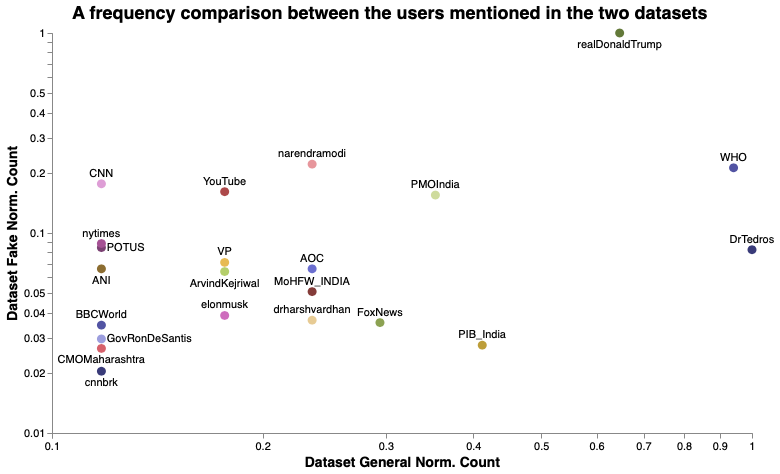

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAEAM0VwAjgzjioAT21Q2CHEmVjx2pnEwB3OKe3042hhDhFCG0EUzUJOFltGicfbzc2bVkkTCQAzAhpEDtZWRiyNAEZNxpZejQAdgAGKpl4GjIsNAAWGpkkBkw2CBoALzg0bKRZLOTUtABtUHEkUMG2BkUAfTGUGWIkABsTTNQpkABZMPVdkAB1AAkAeTOABQAlK6yAcVNAre0AYTZiUrQqygARgqADZmtUBAAOSEAJgAzAIYQBOZqAuEyABiSAA1r5vr8RqgAVVAYCYSSQci4TCKkiqjCYc0AL5SUBHcThcSnS5XADKAFFNI8Xm9FB98X8iUDgWCIdD4YiUYDMTi8T9JcTSeTAZSkdTafTGSy2ccJNzrkt+Ys2DgBjJXuJ3psvurCQDSaDwVUobCEcjUSrcS6Cf9KDUKmTIXCqkiBBV4STmjCQcbDqauYM7DA2G5syLHWLnRK3dLPXLfYqAyAsUHi6GagIYzrmkiQSjG4CSZCBKn2ZzzVd+QdhfbReLXaGPbLvfK-UrA2qQ1KSV3qUi9ZC6fSqnCKr30wPNBiRyAHU7gxrS9OfQr-crq6qLyWapDAc0QSC4bGtRTkfuOScgwACKKAAKpEijdPm551qg941oul5VLCzSQuCMKNo2SI6j2rJpgBZqDAcDDiLycBQN84i6NBhZPpOMpejec5VghdHLju3otpur4gtUVQgqS-79oMnwAEK8gAcnAbiZKOBbjkuxJMZWU6MQubHEqiFQCICiIVC2LbIQiQmAegPI0Qpl5Kgx5YKuiD61hOUowqSr7JjSyJkkmu4mYR6DgZsSDiBQMygWwyTmBZRZOUps4qTZ3rqbBVS+RmWhXJ8UUaZQt7WWWM6wklMVhh+gLYc0770t2aLwqlpwSQ0WCbDEdqnmO0WKVejFxXeRWdTUnaAlGyIblu5JwimeF9qZIAAFIMMIDCfDAQVkJoomZXJMHFQVuWoglRQOYhbp1YM62bW18kdUhyl3gdfU3VxSI8XxAmAqd6AANI0MomC8jYSA0OYayXdt-W3Xl14Pc+HECE9L01G9H0gKJs23M0BxICtYoQFgYpZclYYQ-t+WHaxhMNk2YKtu2K5DbhJoEWlhwMAgTCA7cbDNVArVnrRhN7aptnQ-Wuk0gZdJRo20YCAz+HCegYoINiwyzATO3E0LiVHRpyPPD89wSEBcC8kFaiyaD-PFVrmsi8uyICHCukgrCMKvt6dJ7lNB6DAYWxARIWyyKBiiszg6uddePXWZCdvvd7TOnLNACKDA0JsCgRzd0ck1DOvJcjn1IGQnRIMRASkOINBZ8+mv3fnO1VK0FRwk7SLaQIIIvm+yMAKqfJ8SxXLoug0FANBbDX9Z16TdspQnCsgOITAQJgxBT8uM95+TjfN63ZUd13yE9wvM0csQDAhckG+xRWd2zw3-XbhNIICM9FQVJCNTN8jzBQGvl8grXy2lbcGOcbZz2RryZAihMCMlAsQXuV8QZ80srXcB9cd6KULqYR09ArgIEDjfImGCH5YI1MjZaDgui3BgDjQIxDdrMQgY-JCdNhrrjhJuGo41JqM0XmQAwZBcSbE2OYfwKD2rZRtuAyBp8-JyEUMkAkEBZjDGriAtB09SHb0fBTVuXdUKQlpFGaovEYTI1uAASVElif+y1yLYmIQdcB9lyEw0Ghw0aPCdx8PljNAKq0gpIE+AcJ4mjrroLvpDNSrCYavnfJ+b8ZJfxImRqnGggQ2CaAYHkLoyhJFXWykw+KZC9ExWRlJGSoRMCBDsRkRhW9YnuP+MjLYuhAjyF6M4lx0SWLlKfp4tc3jn5+OmgojJHI4CBXuGPewsg2CNJ0c0gZFD5HMxAvyZQUBRJbE2EsvpLCWlEkoWosU-IM7-zYIWHppNZFxNaes04BwYim22LIb4+yInZWYb05Mcj+EzQxGwAAHlUi2qDImhnvlHCszQ55hgRGCXS4JIQCUbBGDCyMAgzAWYoQhXRClg2zoczBqyTpPPmHgGwEKpEUyaRCBFA1VwjS4WNXxeskC-HEOCmwBzBZkscv1eGOpXqdnXJCZGyjSjs06DQVeSBDDUW+fS5ZjKHknMpegAAWgwTYyBPgMCgCRZgRLQEkoFWUoVazAUKJeWYTJDq0jfH5b8q1x1Hm2uZggHoYg8hmq0ZvNV2tjmaiTJ3AS5VKpu0RMjTQihuWyE+nAYQyg3CTxVdbO5hy3HkvrMiuGn90VVExWhZGjpcysyCnQewE9JCZrAaS91xT2HDLZT4iayMeayG2UsRZDaLVut0dailXrThWKot0cwEAljPF5KBCSrrSnDo9ZqsdgxVFV2SLIMgbAmDEKHd1WEIIAX+IUf9HAMBMlLDOOnUItKimqqbSultQzWXcNGcjcCbBnj2HHkgfkZA4ABqhUG59KyR2erPczW4QELhkEwM47Ngtc2QbXdBpO1zkjiENskB9xKSwyMOae8ZzMrEbHEEBBgxheZ0qzbClDTLRmv3fp-b+JbkaY1+tkpgCyl0wog6u+e670C3AOKJRgqR62W0DbfS1L6KatvfeyztWqQCbtgHAXoUA0i1OEBIYhucj25SY2+zhH7eF6xoP4OAOBbSUVqVY0C-GYnqtDWGb0VMWxtmaB2LsctSOnGIBIeQigM7mFMC5ozbm83sSws2Gmvn2EBZ9ugQ1OmaDsyi0c2LwmMODG+uPURbBdBsCcQOqJ8nBOvpZeZlTYzUsgGQBQZQPwsnZcFUJ5GFxEDhRoLofw6gOvNoLmpkCQFq3TP1qIoKtyGPMJI41-kDqZgomGwpipane5V1IEENg7cqg4EihV+iyGFsary4FwY0zAqKBLu1k7YGqsxbQ5dxrPalizWA+IUS3RrBzeM+d0NyMfU4E2DO3jGiZOgbk4el7XW1MffoMMeQtHH3FWe7tRbidgLPFuEsA4tx1vVdGyJ6sbA2CYHMEsHrwxmqOnw+ayrcOQ25Y82ZkZlm1NvNyaJTQRPHuw+XSTzbZOMn6oUMRKuxP4e6zU0B1e6glggeKQy1nr3kZ89uJBbl-6Zfq4R2TtIqjbBczHmjgjp35sqSY3vNuh9u7MjG-4bEbAuOu9+BRZ4+uya5eRhOgpPvseL17mcXZO7AiM9k11WyQO-dbbOJjPIjgAex5txdypnxNBHgp5gdmoig8Z7U0wBotTpOQtV8G33Gu1OzQADJHAzmYbM5e6ONsx9XoT7Pauc45WpidJcUja9MKowvwO1PPAYCkRAWwkD633YLkh4HZeKY5+2z9-eXCB8XyUgTK-G5r4s33sng-anIECisCgUAx-x7J1Yz4-IAAak-p-n5V0+jvweZqfDUdYBQzxnMd81dO85cydPhQIlhRJAgyBV5IIEAb9XsPM7cD5ZYj4ElkYQIXlcR7hgZW90d28WcQDV8e918ucycEAKNcRFBsRsxSAEDDd8t0AJJKcx4J4Z0rE51eR6DQDGCQAQJngJ4EBkBsA4AocK8P9CCmNeEWNjE2Mm4OM1N+QEB5Vrk0httSg0huDSdeD7UedZAX9alU9d95wi8ydtV2A05NAtDRdeD-AK0o8Ycl9P8LsPNpC35ZCv55CvYjcAJrBFBQ5VAhsgCq9TMSCj9VMydZo2A4BRJShItgjl8Ddsp4RKREQ4YoRGQ0J4wUscd0B7g3hjZFAoBsQcVrDsE1MVA7BakvlodK9EiiCbCrt0BcYGBsRAocAYhsQGAyi2FD96tus4AQVi4JADgrEejR1eDrBxAoiAgDgMQxQzB+1aiJDhd99yiydhAaAhDzBsQtjQgajxCNYQiXCagZYRVeJEZBI1MLg69f1qiDi29B1VikjtCmiQAYhSt8UUg5kkBgNEMEjnDx8ydnggJQIX8lEJ5PgaBfgHj8Cni98XjGjGtNBZgUTZBlDbh7AqdxjRYwiVNvDeCxMrgJ1-UD1nibwT0XCUUi1dIS1IxowUQ41lC-oVoYAcTlw0C3wPwvwdIUkLE1NPhYNpkr12TiQlM6sO0Gtci+DhSaBOZuYLcmcrdAd093MSRqQuE3YkRyQ4x6QwRJU1N1pbhwUjDbYTiyo4RUJkxoQvxOwuEXZkZtVPATSATJDzSW5SQu5NwBJoxLTPxkZ7gkBhAUheRsZkA69oTFTo8iNBZbcS19525UDHc40JIxjF8Yy49ED+JI03xo1qoNTOVS4EBf02Yr1FBRSPN4tqYfM-N6ZNc0ZmhjZNgRT0y-lMyu9JSZCP5PCf41MDg2As9Z02A0zljrY2zVS2dwx6SYw4wEw3xkxkYYh-VxAZhiBjtRyCDyTQiho21wipTF5rFRIlgSSJ5DMMzFQmVxYURJYERYYcjF4AA1AXDcy8ccu8VDDs0tBk2c6Mec+8maW0VrZPVIPIWgf4l85nLc0w3g-WYgfkXbBwuowEyc2Gc4sVeOMnB8seXYg4KAZNFc9-I4+or-BRJQnAHMQIW9UUuNXGeVGAXkfIGAOvKxB8-kCs5lHc5TSUxcijSIfVU0+5IE3gh8q4R-JYSiQRBQJYw4zchEho9Y3g0MpANwaYr7cQXYjMV0qCoSt4o4eVcCfw-rMeaitTOvZQeAcQHtdcmS+E1zREp+M456Z6UVS4jCyYlITARYWQGEdijCXzFCLIjCTzPUZGCM3ocSiyuAayx4yCuSki5mOwAIWYboRaDkKCLSuK6C3S4uBgAbZqNGEy8g8wNgWgdRKnYJcoVss7CcrMziiU5jfcgJeAY2HoAOURWEy3J7N0nS5EwMmgYQQIJYW4B8h8wq3gxwVQmmMat44M8eSypAeZQIPAzqoXTKtU5jdw7s9jAkt4pcutew+ncrCC7RYirKxrYfXQW4aZSnTQjKuy+Sm1XguvXTGgJYaa86g4fkegdgDowi2S+6+K04TQEvcwTQGAUIWQTQZqYhDveUQGwYWaJAYozGdi1CpyhGfiK4snKGzLJAdmZ4SCBgcOO66Ley3ovE7itTXQMRVwK9G0Otd66UzQfQOZT4ICC6Gy2KgG80lJHUKkGkOkBkJ3MnM4DEZ8zmk65CrMtG7iFyzGtyt43kPnXddeEmnLaWqs7zWmTxf8hRboeVcgRYDQkYKq63XqM66UoCFqXGICf6BgXoP62y0mh658MkFydcN+ZMF2ekCqYW3g8i7mU8xfWGwqE48U3vCI3gsSXkEEXkWpUgA4RmxeICICcFZqOg02lU82tU4EJ2HUZCVsNEHcd8OEDAoCE8rYSMpOmaQhJAcRXGVGtw1jHshQsnHtbGXGDYJRFaZapU5yQguGk4l+TauQu3ZGTYG0LTPdMUPFN6tWzrFtRy2Wi4+WzjIeTYCgXkb4JRB7Y6rq7S2-dysLNgVaaZMQmKyW7qw+t4roZACAHAEwYq1Gpe5ylepGNTLEbYxGhAaKuErm52+G9Afsi4DEM4Y8iScuqw4Oge0OtUzWxLWstJNTW4XkQcVGvoymsnaZJYOweVRu3xLs0e1uwkq4ICIcPkfB4e5u7a5GAATQWFAmYCjMcLfKVA-OkS9MLt9PfHhBcgNLJyAjx00AgBN3lPN3QYpo32xt7lAhWmKPeF-pWpj2MP6Vqt5t1H1EFqNAFLCUxmxjSDxkdsI1YdUY7OTHBFfk-n2laEVEaoUWHlHh5hKxkd8oIZHpbv0ksSBn8BgH1mBg6r7tWu5pzo9Pzu9KLr9NLrUxmAMEsqVj6xhpgZhARQZBjA-jfl4lREtKTCgX5CWEDP0zPpmGroUSgFuxiGsHgPnpGyROlM+CuFEitAgBVjyBKeZk+GeHqdEkBDadODZs+BVorM7FpCTHbj9EtJcjseZkNk0wkbqojqmdODryJrgGBQ5Fm2qY2wUreIuAOFTk8B+08F6ZEmzAYB7tDOhLFGEFRoEhjHblbFblaDdv5LAPMGUE2EDOQEvW6CMeVLT2zsnJ-D5r1AFsND9reMxL1SLgoDmE2ZFyfibo8Joa2y3oEuIzDowakajoWA5GKt0Drygb3qCYAbDpfoxvfswoxHThUFmbhbWMereO1R7S5VXmCwOE+mOeaIgHEGV3LLpbJomLeKvWQHWZLwgHTXYtzs9ILp9OLv9Nr2NJR1+f3rWpQoSW5OSW1F1H91CXuDIbrwuBHIlpVeCcBckfGh2sa1GKPIrslfNZ3EtelPaOYG5ngC2EqqJacKvultufXFpE-EtJJAZBeZ0KQF6F6C5lMBoHmmamkovqlHPIBZrzJzUC6BWGmQoAWTQk5ZAE+nMGNlUBK35BNs9ZUfVo7PDtIOP3GtWhWl+A7rZP5ZdvrA2uoa8MsVAisSWBdNLeAKZTFn0mvKMmlm9F1uZgMAfqYG5klb0glmHbvM1w2gxGgP8DOC2AbqbakLcbbd7LJ1xU8AQBWhoxzYmxUu7ekkQpWNVelsxbIN4JmGBmSEWBwCOuNeJfLZ4LeIkmGAPcuvsCRpWhzc0Adt6F5AixLbfa9YPuTcUtmG+D1QM03YtsXguAFAjIzs9cTZMJzvtZ8jUzFE6E3WDPMAEhzbUAJRgGpxLiEJzZmJiMCl6Bo16A5vjffYXteMazIiChDlMHkBzdmVgDrxzEUEUcCag+vYrbJblopd4MT1ElTovZzcBmUEsonhiFRvVaSV5K1b-EUO2TCgDo065K06Be1cNIIvBxKysUTqQ56stsCDgDaIopzbjrgFIAxCAkJcg7LfY8bik7fqxtg7iaQGgToBgGBRBTma8SrcjreIjZsCWH8DRdjLDvgZrOS0oU+Akgf3uEAN7eOLs8XiUtCEQHBEtJbm9BzaOGIG2EwB-wvjEDIG2EoY-HceRbJwaiAwKVgpufFXuYDaeeDbjS5AUCWH0BzcHwhKRuhPTiQzNrYcAZAFNi3WGE+AbxzdAiAQkEDNIFMGVbY5qcGVw8WbOkssjwkCgF0AX3y9OsK5mgsta1EUjJ+n2-E9NZg7eKuE0AkkXVs8BYZDKljG1I-C-kZAqk4yCUCjrw5b+4+8a3yJwF+yYCYHMHuB8aq9rSQF2VgR+hsDjb-svug4rewmrO1tXCibJ2TVEVwMdHlPB167uf9ceaDYZCgXjtMDeV6C3zIB6dh4YLeNxCKZgP0DTgaT58-eRP-nUHBURsi-F8U0Ra2vbfly5jyAUA6BU5zbcGEBBUwGaBzf0xgHEEgi3wyAi9RrS7J7rLGyCl5B025Xx6UZ88O7YV9f6+Z+eeRmpunXeaChVl7uj2d62YZfOquFAl7i4Mzv+ew8nLQkRDRDQm1OMR1CQbALE1ZnZjlLNx5mS-bJq3mZi5O-QDSGGBzEBh6ElfUf5oNCFowMDk2FkFmhDjDlmj5Zu6lo7M7kdw1e0+RjXf1SxKOBBTHkd7E6D-hZD+lIOFoq7tmHhBs-b+9f58awfLSG-Zxi2J7pzeYK7vNhza4EdDiLCzgAkD+Hl4P2O84zHhN-YAQCtoV3Asg6w9MYl8ttmGxFwKHlCAoBzYuFQ566j5lsmMmnHkqZ105k5e4DUcQLa3P7bNGsj7LlHpgMYlAWuhDDxl+iDJLlAguyMgD-1gFsISeWtJLEMgp68FgsIKfTJXEzj4DBWjWcgUsGoGL8ier-IrmbFerrRNAW9TQHXii67l+iamK4LAj4BLBQuHrbzn22Q411A4q8QIOwHuBVdPAigGZuwBzbkDxALBf9DOkYHiCCu19RrMIHBy1JyA+-IKJpl6DyBNgfsAJtGRMbwQ9B0pKIndjgBMAGAQxPjjQKgxvEraavRQJjHlRdAc2nMPVDEG1A+UPB6GCFsswWTNNROgfCQXdwUQYgxEsyULM8FmgTcOgE9eVEsGsGOFx+9LWgdKUDI0ZNgv6QygsnmI5tlCoiLJCPFYLTIc2v6KAOPDYCiQc21gURD-lgQSBEaJEZhkhSX4sDv8gQUgB0DBSIcmBEnIYQol-QT0GAhsNQBt22TYg7A2kbfp80vS6BH+rHN7iSwSHMxMAkEDojpk2BLAmAbAWIXkPiH2DF4AhDOBkF6EM59YQHXGCUCrifRloCwFwJcOkS2CmMX5GcvGF-JJgi+IAepg+SsQKcZIokcwNa0lZ6grSLsKMNhB3Bop+G-tbPhPHkDIAe0Z-SYe92X5M0JcGhW4PjhzYuBd0q5dOIFHHiXsiKHffPtFz3LIxrqtoXoA-UCCpA6R-1PYTcJmiyA7MzUZVPiN5Fw9pSUxXdKvFH5xDdBYoorhcIOA4jlAFAXIQMOYEcc6m6vRQD-gb5ZIA+Vw2UYSMXgQ12Aaga-OELexM0fo1RTrrINe75CBWLbW9tW10oLoJI3uC0d3gL7MiJ8E9M4Ncgb68CuKWLN4sXDFAB1xGFo-3MkCuB5Bgo9o64XKJmjapiuEAEiAmMNHTDpmgMQKLGPyAZjbuKFRXkQ0dYHkOgmMVIO0RzZWJQ4IKLmJ-BzYaFYEaKKoXQGax7pqxwUZQLIE+xI0aM3Ip2h+2ILej+BbdVwJBDoD2Fn6nEdGtJ0C5vES4q8VIMFhyFbECxDIjUYvAki0NYKhqPHkMxLQohkQLcREBMx1DIxswyQV3HnhzbTJ5A6g-+IsGKZRj8OUAY3uomlEGjCxSYhRKohe79AN2IoocRfxHGYMdCVwC4ATgkC7pmo64wYZuJmhQAEAsgGANdx0HfijR93YDJsHoAq0OgObT6J9EJydArmddOCeqJAlMjRxOhG4rehEJt90JG42povHvrXI4AYSC4KgLa7K8ycJuE+irW2EE8TWoozCQomULiA3WOEo3t0hfEddtU4lfwLfQHH-1gJcA6UlS02IE4rgGILzjsIdHNsIhjWcSZJPoDjwNuPdOAFCSpxiMc+nojilRLAlvFZkIUNgPyF5DJwc2-osLLIF2TqV2hdAPoGEFVpATfOakrcd8QkCiQ-YGlAoHZNbZIseJvBT6PAmClP8-hYdYsegLUz6YnxbAHBsoFwIqwc2HnTQATlCTn0hJB3YPoUMXgcSlg+FYGIk3JKD0cOoE5+KWJmgNS58bWRQOoKCCeTrgXUmGvdTijwoMWl-ZBkBF7hNlIyInIMfVTvaK1yKuIe+ud3ED6wYeIUl3jVKBR7dNg1gb9i0JmCqir2BIrMc8iCgmBAoXQ0IM+K2nVTPBjWbMGKAwg5txA5gcjtoJ2HP87BWZaEG-C9Dvg0ITsD+CGzeLSpZAMwdmP4U-Fqiphw4hySGMay7EFiuMZSvNIWZtIM4w-MQD3QZpxTnRsXSXvkiTx1sNm90ifjtIUSaANCOGWYYFEaAMICZE0yIkFDgD6xwoeyCdKvAxmF9kYJeGSRTIKGPTpSkENGVDPZjKS-mQAyQQoigJhYYgEkNokBxcCbAuhqQRqbJKerpjNAq-XUVLOEmqTJ+AiJvMkHOEO0c2yQEuHQB+BBwvplU3YUbKpnMwdM1QtgFMWTwG8p8xvPdJyNtl3Yc2-Ie+jEB+aBk8gsM06SJPOmDB00tFYKF0HEDkUeZdkt3kz0Dae81MzBM0WwS6FI0uYObERH0HxT79-0VTIWY6PYiEzQR80ZAGzNvRPdZgBsqqZTKdEszeC2I92WKAsDqC3AqNAEbGCBGJgFyplSMs9TcAwDy5BksUlXORizQ2amgQ4bpgjn0j4JzEmaJiSrjYhXwxUs2GkGQBLBYwIIdoTYHZhqAwgcAFyBtwYDAxNu+ouGWdIQkKJbgiwJAATkyQnSV5FEo7m1MWmcdyInMWwCf3YrIFEyXfY+GO1OAwI-CzAFQXZL-KlQo0XcGNGDORID9BEeUwcJoG1ACB9+Fw3QBYJU5TFyRfxZQFz3IiBAxQaEvSYmNEnMxBBJeVIMWynxKJl5PIp2SLMXgRj-0HSULBmknmLcxMbk8WtQszGPyYMmI1+VCRhI5tPgGIL7m0K1m6VbgGIIas8HkHMyf5LoxrCrSWrdBia-C2WczAnrsxoi9w7ZKwsHGhTjZM0bYP+nUFkS75kc9hYZOlI4jpkohR0DSOaYWKVJVi52acH0zm4VoIjaZCK0cWfz4ZjcTKe114JJCuU7AK2uoP8mQRd096HNvACuRBAdM+eDOAxJEUYTo56AOxMEsNj6Ym5jsvxRwpmhcZ5UJw7VHjVnw5slgyhAwBPHOH+FbqBi-YacFgpnAr0mAUIHkodn6T+2APD2sD29pg9wWjWZaKzGmRhR-C9sp3jQsZF8DHJjWRwUBnIxBQrgwcu6YxNXlhSZoehHURVOWWiK151M3JbUmW41ofo-QpxZUpcUCIFgu2R0LdMwDHhc+NVWhacH0CmDIgKgCerzJ9Fk4oCHQDYAwCWBQ1ORDyiJQ-MuXtMzQohcHA+QuHFwllY-FZWItOChk4AxscePIAgDPAMQRrfJUxKOXnotguSYtjYEGK-9e4YmH-HkEFkHKv51ihRCHCRpRVEua8VsVyA6DuDMO1Vd8ot0YbyNtR9gSzuErYVPLNQGpWEJuB1LVBzG6IxWooF2SwBYA5MtKSKpj7S1oliUr9t91Km3BNAoEK4HXjYqKK6BNAFWKvBWjYgDALwq9LjD1YKBwarRRtl0r5EKJAytFWQFYlxE9BdIJg8QMIHbi88fVP4mDBcDyatFJWCqrUsqr1KoRKkqHZbE1yASStw0CC3Mkgu7AoLpSFwKfB4DOVYqLl38xGb-OlJAZ1ByhHTEsFUTdEbV0pWhPii4zVjNACAXkLkjLIvJcY+MVtYvEulihhEBjYGDgHjDTi4Ys4gLgrSMlwAsAWMIKKog-myrtprczRUTOlKXSmAdbHoBJPImRKEW27BKbu14JXADgvIaFSzWPbDqa6MQfwQ50qayBWV5Kw5RyuzHpx7UE8tlSeoIEJZ0uJA5GPFzOHAYhl5ygpYpn7k-kh5oIkCNqg8DNQDgNBQKa4yobnqS00y6UqmT5CcSH1CifplbQMCZLJWoTThrK0ibIx+QGIZbBoLYKBzZAXGTAEuxzaxEBypqLEF8W+VJtflIkGwCRGNpJ5uxMikvvkT4X-qEVlK5mJ9FuCfRe4OAMYJiplHQbEVpwOTXJuz4XyXO8AL4lyC4ywAwh0a-jVoBwk9spNUcxTP53QpxpzNF7O3o6lskmbClIAKGpgHBQXA9q1YysbCJ0lVcYg-IKYjYCDouacVRECQLUnHj5JYFmHdKetRnlqYQUywYDMnLi16qX+4WpgqhwTVxSQBmrVJJQguC9xfsO9MYRN27FJUiiMAKAKlI-Xsr-FgwKxAgAWKfQe6twTtsAt3DQghoLceMNUGMQIbfBHlXCurMo4grqJbxM+mkBcCWVwoPiwngBsa3oAYE-WBYoIgN4KB-AY6tOIsvMn4qPVEmHEIJKg0Uq2Ehqi9QL3TGbAVYLWpANCAZ5+sHm6cobmplqT+FzAvibUhjwKQEUoaugY9dJq-XPIFgM6VICPDhUbqHpzymaBxvyJndINFatTTJtOCyM4Az1GbGlX0WWbnF08tuQLwMZIBdAu4HSFV0UmKoD2RwdNIsMI3MxVEV6dmJjGajYhWwFQKoX+le62D2GCMtZUjLqbUI60C2w2XKtcJnqlel2mZRkuxDgpxugAs0t0sGAJziqJWKoXqlOYBAXOfhDomaGIjNkhdzc4WTDvsbXqCcau0HZDssWbqjd7TVzl1xditjNMGcWrr0G9U465VoVToL0AWGYACwt4ieuIAQAu45uWdBbkPTRSthHYoIT+OSA-g7rk6R-QMgsBwk5tlm2wC4Mbh1X1altVShRGcG+4RTjp4JCDlnqB3LaQAxcBnC4N6DmAZVlu6HZaMXhhz2A2qfkBAQkj8gzgkfMLepuAgqLM1LUSPLxv1Wmal4XKLYE2pGGRj0t83TLZRN501rF4FQY8lREgK17fFVuhvevOYBXUmZ3elHYMAj7xof6qNEBQ7mPg4bF4QQPZAoCEKc74tvqjZM8C81oyy5uqmfb9IraW9iB-mDAooE0AoTZguyLLLTtOA9zvq3LRTnAoRHHobSKI+0mquRLnDOgtCewMgAuAoMlOaVKuCVU6AUKVNX4s7a7STVKrvQKq-UsjHmLkQeYIcEfhPWUA5sMkCABZWKDlKBRaOz1NmEFAX5u6N9bSKGb1LxrGUQDTW22jWOmTZrhDaWXuJBO3qvsS9VmnvegDyAP1UgR0g4LcSA5sw9UAKiSJwOrEOAYANM7UdcjwAESJINOPRTWnXV16W51uoGn7G2zZJDKQxHTFUO6BiBylIywxacAgDUE2CoQk9iovqZd6eD9evuJ9GNi6AoiT4yTfIdx1MlAgmgHTLICuqyBPD2KufcGIX0zRqOSAEFJSJkVIgJImJHbXXX8lqB+g58XEO9MB0KGn4sGwefOVBGfQNoy0IKJ4qjWhHbDm+hRJ9CHD3Au2Q0jRdWq0XSlPoEkSCdmGDmVjg90fLJot2TQ+pX5QxvfcDsGBN6ByAUyoxiG4NxH3dE+eANgDYAbHNwOC4Y-PtGOX6PxyAOirUfiMCl2aKxt-SHtn1VqLjcemaLdqNpwBOjex3g9cS0yOd35AhW7SXhzaQD78tGp499Pv0xrTgUU4DDFPBR9GyO829QdnM6VdHDdPR5mJoFSqpAPlD5OvCx2GUZH996AZ4A+U0BahGhVJzdDWhO1I7CDOe5mHoWflTs5kQc9nQ3xtkuDgVkhpbtSuY3DBRNApzQB9Lym8gMQBG1Y2Xt3RMBhAzQ1-X8bCPc4ugiPBDukcrVrH0A80dZvyBBQiDq026WjiRFSCWg5esplk7isCAbG6Q7Q3eUwAKT4H75dR8mtutBE-Ndi8gTAA7X5CzRKTjYxYF0VEQtqrTdhwYPyF7jiUbAyhERkEXDNilCBCDVtKQLeKaACKCqf9ITgm3rKHB1aHmOnpCjGasTFcnExdJE6zAesh-NfYttL1bqRjHx6mYMpH7GwCaYbULaWankg4gE1h9faqbAKQT40da2pGnD7N1m3Tcp65N4trPC6N9SBeMvbiTLn7usy7ULLQdyWYmVT3RrGYMRL7vIug45ucwOd4LCBA98Zo8wbrLNdp7AbAeEPrwFMqwwsyVOraSe1Nl6r0yQDemwBMmu7tz2Jr9HuYgC21UOXEndsQzeKLHTAK0gY0B2UDTJ-oukaoBGBJCNiuxMqMUMFlDh9AxNx9CAA+XeBWCZFP3Ifa8dfKghgQwzI8WM1PFdoVyTpuQw7J+mXkxdJYi-bDo2heTAxcuwSpOT9K8NgQ2pZMPxGB5QJyIwHewH3OnIDy5yIImjYMqDiGwS8XICYV2aYw2bXKliIKL0BoDAoSIYwBM2pe8ODAN5Olw-WTuxAeAgMelyyhNx+BOn9+5EGwMQHNGJm+D-ga+TiGCXAG3L3ONRByBWg4BKFjAEs-+evMf1uV5wsrJXx04gsa+2jMnOzEWJBX1QTqHNlhVUTDnjg+ysK92YFKBRckE8ITmyNzN87F44Kq2sP0ZOqbmTEZlbVAHFYHMoqWp5HTqb4IE1MkuMGYIxdO2fqy9TquijMHECvnerDW604MGeBXBbgdeYDKFgw2tdwLnjbnKYE+CBR7lnwaZBXwFMHA-9llcwBJF3R2tt1HU0pjgGQB6bgQLnVwLUmepUK3zrVsvZsE2IGAqtsATXU5vYnFwOzjoGdWhU0sCkbsG10RMPhEZkctiUlUeKpzuMi6fazQL8NhG7AGIm40IE68zD2rfE0lAprAKBA8CuAWrtV4kBduw3Ixgyni9orWhnS0dUOtwGQ6BYFPKd7CWwTkfjb6uixZ2Q7KWAuzUwrCbQgV20FXGCiU3Bcl5dIgFXQiYQYwaZxrAoArRCifjN8bco2dBGkjI8VceRtiWFth0Gjsl4ecCQaZ+98ggZWpE3MVvvHQRzTGIO9MaDdBqrMOU21kcuNNU4AVwd6SCkxJiDWO9thaY7YUTp7REklSjAYF7ma2Et+OxrAHCgAE4oAuupvArfGkenHSjnOAEfv6r66vbmMgUoFZFa8hyKsCE2-HaVvIwnzE9EKHPSJbp2+ZamInZBECiWU+VIdlColrBWt64761Im6jfhM0j-esgMiCCnMCgRRqDdm9mHbbUMckAFQTbk3g820MSTK1Cu6CsJJlZes607JHZgJat3G7I9gRP4DOGKBhRb7ee5NroFcB2j+3Q+3maK417o7iwQPSpxgIb3h7CdxHKHDEBEIh7FbJu7wTrQl5FlBed+y2nbunIDAqcSulTm+A0d-7POh202eZi0MlatiXuKMVoa6TKp59sqzNAGwIBMHmDuEA-ck4zjl6tmtTGFDYB2JIgeD1ZdA+Vth8I+FDrLSAFjlXp45EgJObbY0hiqVo5N+gOYCpb6p87bd1i1lLJz9ltV9DQwpA8yPe2YHpwXENOhWgqU6HkjjO2Tjrzap2zCOlPBI7eNUPx66cAGGaMUfaOpH5txgJweaX2AergTNB9kfPS83r0-ZV3Ht0MdsINLq9RQhiAxB216AzNbZGfYymCOYlcXS6TgF0A4MUgrWMXuXYLtm3OMyD7Ls45hiAO1MkQBAENYoBkAJWWjthKfuXPoEBSbzdOJ8yQDfNR8WTsvVESN4XAbQgFBVMXtQfROdHxebYAgCgDV6uQRUspw2Zidvbswd9FWC1DONRO1S-lTIuLeCrNgv0eqMRKBEqLmAZimSBJ108adk4YpAQHtAoAg1vXOnlcrezNCULpxzA22JA7Ze2d46n7HXTgZoH5BYk-z9T9aq45k5vEXBvUxitckgiI7ZM1jn28zFvRcgE5EZYKIs52fnPeCmAXXhICnGnOvRhd4h4-ggKhA2Yg+qF8dw-Bfo4XZwxqHQCBdikv9tZbsJriWqZJluoWfh2zk7BGITEu4fiPGBjAIHpSvIGEKJCkjuBrkljz5w0+Mcsj00iy2c7UBOIUvnoVL8xGk20hQIUg3QK9EkMqK76D7YdfLdp0K1qYHykIUSAx3yDYvoX3TsnNCsF6Hs66Lp5KF8+keK7xxAHEORq-slaveCUUunFFVmhG9uWFrytgvfTNN94AmMcQMtHTh1O57qXLzCmZ1qUJGAxRQEBECdepzntg3VnmphhDAonBmAXuKS59Z9c05UbotY3uwpLAb0kl5F+M9J7f7reZOXkMYHsAxFSgDOJNxWwjcDcWe6bmaF9l-uP4eBub6tx71e1k5KDSdsLuG5TeRva3ffCnGkfgA9iyob4Ht4zz7cZywVbzM0BNCqDjuntNbqd0lLVslFUgtockJVxbe9ul37b3gqBCZ0UWF37vF7dG-IJ2qo2bnC3W6CYytvT3dbhRAHGOkpGvQx6J2Me9Tf9va8vxenEsE27mA6DH7yd3u7eJWIgoXrsQPxVze4uMuPTopnAGaAsunXOTsBXk+Ef2AQUIrBEE65g+BviHXcuANCqfJAfd3Z73glUEpzU5MYrl2V+tVw8-61MCqWpCVh8AVpzAvxu5yhTvdpvkYWbqKSfVkDppqcZd2j0WICdGrzqBgbVO9KgCUgOPvr+5wQ9fpEOOuOxd7ZWbrtigfhhrv18meA0MeycuXOunQYZBRgnXDz+cY1hf2ZJsQbO7dxO9I8PvmYX2K2vrDrzLMDgqF3N0k+EdjwVo0yAGTVG3n2fF3bbsj28SE7dA4AURGID7u08xRb3O7sL058gU-sUei0TPZx4NXieJd0pdEsQCWDkcnXPn2JVjC2LcyX5Zga9-8CYz0fC3vBDM3r1RCQgSPyX5GHF7JCWl5PVj-x5hvF0QXtFZWVdwqltDmelP5LSz9KTwRNr2evLxLw57a-4csYt+2gMUVa-3uWRFthkIM9E8a1-X+n+r28QRPYBZon0apw0Nzfa3gRutqOpoGjNvwxvs6wh-9cM++zYEvIEo-Km6-sv1q3Hr9+h+KIQAY2jqdbzx7UxQAXr-N4rzl4G-SkcAKwCeL0G3E4f9vVvfF4x8rH04yADA0H-994Il4yA+xFH3p7R8QLBg5woYpZUvneeYfHdwYMuWKctRkgNQJ15-beINr4ANQmIEwDaI17WfuzhRMrnoBwgcrWXj+wL+Zjt0uY96VuPz5BdOTlKcda5PF8Uj9tc1OZCqAWtjQf1IgPgfkCPEU3fe7bHL5R7wQWqQRw1whar0SCNfVy9i+bNiaGRzBy+YXKz5HJsFMO5u2fjWZ4IFFkDToFFQzlCnV-R8dvVCCAEo45xgB2eg-j91309X5DPB+QEDIULQyuDuiXfVrt4rE2V0cgu5bL436Hfl+NYOk0yEFKtP-SXnbfUCQBG-I5CZ-ln+PoKOzHnde+JfpwbGPeKJq2hxHsf-B09+U8veYKBgVILIxIjc8LXhMun0Az883YYiuvD54X83vF-pSCQHMBTgGgN-OXteH8+ID5BTPoSQUCaND768lioE1gbAP2UMqOAczyLuG5-FfDGJdwNIZCKCBBwrR04F8o3+w5N+V278EAQKAQBZkcNj8cBHU-yEd93eACGpebc70X8f-RTwH8JvBdWlIXAT4kI9A9Gj09tf-F1ytYPKQMigAaMNhx08i-ePzeI0xLJGUsIAcwGIA4A4gLE9wAwJ1wDcBTJGTQXrKLXLUfvZf1IDGsNIBwAIffeywCSArP3DsuUGIkggVKWhgOAs8Lf1N8jvKNlSB6lI3hkC--XgjKxdiBDxa82-Ff0XhIgNXk4dNgTvV2MxfSh239MKeVDoAbXe8QTllAnAPpd5OTQDsxS3Kv2wCj7IoWwkaAUCEFAdQGwNcDapO1VnxwwcMB8CL7deQUBMARGjW8tA7gOlId7AOmcCwAhayw1p-c4HdsInUK2MCoHUwN4IqMApF+AyAJS05Fgg9BwURkgIYk2BZ+BZDKgigmx2ZgIyVRERoybOAHt0og4QLGNp8EtXEAWwRECTBaQaoO+cgaOJmkhhzW5wU8uA1oMXgwPBAChpNgK4E6Bh4SfGVMMgpRxUC3iAmnIBlfWaD9tNgb-zoDsvBgIk86mYJGXJrAYgA6QOkPoONc0sSGQfIIALEGgB5URYNGC9gxIP69kguvBr0q4dxTgAdvQQLGDG-bPz3QYgJYFxAfXHrwQC-rNx3Q9VvFWFKFHvCEMecS-BYh5gIAWFj78TA2QMaxvoDkAYBcHFoP+DGsZqBwl04LrkJCT-F4LP8J8AwEc4sKGKUfwLg6uW+xM1aZA-gY-Xb3F9tAmaAEJgoQal5AZgeH1JB6Q2eQuEyhcQDbhDIFsEFC1MfIlkAQIYYnEAkhdjyRBJ-XDmSDYiMgFkAJIEazBC-grILeI8pVbXaNrfPlyED8QtwMllswUwA6QcJHYIS8XAkIIURhAbEGEAclXoFZDfguP3GCZofIl9Q1AYKCsRK3dEJWCeA+OUK8xZIgNtDfvJLw28+yKxHnR+Qe4AJYHyG0NV87Q4oOZguVWwAnRbgT5FACdQjEOlI1g8wASBNgfQFfh6GagklDWZAW1swzcAxzxDdQxrCgIDtMHFUIp2HTXrD8wxeBcFzAbsNcMOwoMKn4-PH9wh8UcNgG8CaffYNy9k6evn0JuYKgkrD8ffrF0BkASILRDMgzsNh1TAMWTIg7sWLTZDAw2wMXhk0blExJegV2AXDwZUQKdMcwcQFlhZYC8M45swQKH7IIAZMI1B1LcbznFkAxeGNRjbQYhncXBbAADD1wgcMXgF5MQB0x-Q0on7DDwmaDgBrQBZE2AyVJYKMcNwh0OiIewiDW7AHw6UjR0pIRqHaVswcKBwiwI37TnwFiIVX3DFMEnwLcowKWzGMCcP9zFAt+GCN8CvQyIDdZ5AdEkCBYAN8JvdUwmoNOAEePHiVgjQ6vz7IuYMRFwpk0YOzXColWn1nlPgMWTEBdsEiOOVjAVuEMA1IuWVaU88LEgs13QsxlFtRnbImCp6IxeHAN5UTYjIAGcEYO1CPQ00MXgIZOIKRpsQcEG0jmYYMlxB13QCg1c0QMEE7gXIIaDJBKQFuCFCZgGACtp76FIC2c5Ihyk-D51cKKxh8iVJzNgPI+qHAJaGbUE0C4o902iDF4GZzsxCLcwFb1A-KiPkjJw2Hy3E9uRoCL18ZXKMScFIt7X8A2DViPtDmYCm0CtcedKPJ9swJriXV7ANGR6j0AcRAkkAAmgEtNyo1CNAj15MWXHhOgNNlmgm+GUymi8oz0IURVyTwFkAyoD8GGiQAfTCQA8pFWBV93wgSP6DBgPFXThZgMqEdhUIMdzai0w3FQzgw2E2DmFGgPaINMgrBQAgAdwzqz2iAAhYGtsV4EYRldDIg8LYiFELfBKIyyQj3ToxIs6MuDc2LYmDJ70ETzBiQI2CIURvqWBHMAYQawDNM-oh6MEjgIUQIwgaXVoHSCng9kPyiZoKGiCgqnTYH8pkLVsA+iI-TwCLhzAUED2ioonFEwAaxOij2jOYXdCqJ3tRwCTB-ozylyAIAbUD4iavBGNBEWNGIB-x85ImPOj-IGd0dABCMLC5jVYxGK45xAGZwvlsIIujjA9og4E2ILkWNmwA9o9wE8AMgJYEWhKI9GOWDMY5mDVDXgC+VBBcwhyIbCiRIKEti9QIS0jQ9ojoVZgyoFsV1jQRW+0vRcY-iE7g4bSmPsjqY9aOZgp2HYGKdAKWWJt95YrtFZdzAPTXhiTQ32KK5vsXQDdZFALOONC8wmaIUQJ6bVS3wRWSuPEiO3BYldwdw44TTsc42vE+xEQPaO0MUJBgXuU9opsNEgM+enD2iwobYknwDEN2DjiPotgBiBOYWbkjjkYDwBkFepXewClAJVaI8R2-EyxSAUCNdmwATo-iKLi0IunRmBcBVRAoB1OFeMNIWoGIEKI5pO+LMCqvDkBRCwuDUmHjk-MKFyBEQaEFjAWfF+N4IKgEtXux0TPaJvixZaoD2jAYR0H0AbAULGfiGopZ2LiZofmLdVIgY2BhIdYlBOBcaYhRCARWPXMDSAiaSBPsBzABZAA9QYlCLWjHImaG5cOTYKA6II8VS2djpo12NOAfoOimURvg3ELwSznAhNqCT+VfhnonzJ1yu94Ndr1dVcbJ1V78d41BPPihIzwI2Mm43r3JCIA7KnjFVrSnCYdYpARM1d6EhRCNQFTPaPoYGARhhcBsXXR3e09kadBKwFnYBK-YnLDOF-ROzdhLoS0E89HZ5J8MILhC51FT14IrBJ9yDhm+WwGsSP6OvBocQjDxNdp1fUd018qobXxPwtgawBXg9omYACBSuWWAfMDEy1yMTvUewFODK6PaMghzAHmGKoSIfRIUT8ElOJkdS3R0GzBkNeIOrjOEwYDrxeQXuFKxKcHJTNjzAfjx8BFAK2nDY9opSIpwQQidEOEJ4Q6ycTcA5pkiAD3YeIaAyAX7FBtkXakChBX4KECbhUIOOJPheJUoGxh6AJtUYA2ib2LMZB2QyE5sZYMn3QA8VI3gWpQOJh0LiUKCz2-DNw-IDeQRWNrUy8qY4pHMZQQOMDQhSQGxmRBlbZSiCgi4MRF+Sk44pAHY52a5NHYsZbYHsBUqfxOe9IQnQkGwoAWRn8syQtAUYD6XW0FVBFAK6gnotrPJLbBGQMEARA4+FyC4Rbk9TBoBDAQwD8TZkqb0pxrkCwggArQ1qLyTnXCGPTDyII3jmRwcNGNoTd4jkLtRydTTEnjj9dlMXhI2XAVVkfgM2P8A0xZ+WDI9os+gdoXAaEG9pdQPaMKZ9MTJJDi6VHwB0sfrBVJmgp2Eqm1V6JWBJ-onOFwW1VaAiMMBYNGUFiFodwMmL1g2AeUlhFXAfFO4kpwmaHUJakdEifV4xFpOeCCUg4MXhDAFIH-YfoIT2AiXYwVNS8ZgH6FztwwlMLPia49MK2ASiajyYdzkgByaiycNHQfI9UHTFIhqVeRNiTFEgtNS9sAeADcBBlHmDdS80+gI0TCU8q1+1RaG2xoS-kjGIzTgIP2HEktkETgmwT4uWPzS2koBkx54QR-1pcJY+wAoAotWMwkN+U7313URWVYDsx1Xa1MISNHCQDK05vLuLJxBCWAAcBHYoDGDTFrK-m1UELHuhKI9orYj8JLbRAHIgH0pIJr9DQm1xIgzY-IG-ZRkkiAFtGgODjNwL0+dLHT-IGwGzAioxQEQy00jhLgyQARAGQB2YZoRuxMkeg2PS6dUtOBgYAWQEwCJUptIXTy9bGXlR1A8QFjsCM04DxoS4AZRhTOAn2KUTBgW0VOFuNDFSdcaIvF1bgv0KANuBtgMgDIgk7LtNOjYM9qL6Y6EeVCoxuQthPIzakgpKWYFgWJmsAYVSaMbSVMrxLp16+XGlUQC-eANaT0MkcIaAmAFyETi2MithK8vBeJX0JZgF5PYzm0wYFRh0YPRn-ZcYReQiT0PBNGwYPHRqATcYk5TMES6kwYBu0zYfdXmR00a5gYzBgblFcAaABIGoJUMzxI4zi+H+lkBrQNZJ3S94oBmmQDgc4WQBuY0JTgSsQVSPiymCc1XCR+Ut5K-QVOZwSVhoIvLKlTmYdPUUBNiP6CDJSbI1JHwpRHCVMAJ-KrJABtxMiBmB8kWZF2wy0hXgrT72d-nGSIAdmBR5h4jWPLDjM3YKrcowsHyvSMzQRHMBOYIoiJoWoM2PT84w+4F5AppcSE8DhFULMMS9M+E17g+jbVFJV29bVDy4aksLNUzBgVUG6BxUkdPTSZMwYEdCAPEFEo4nYu7PySHs8n2NwX7OyJszwYoHPQASsRxgnhwcP+CUyActDKRyUYPdBR4GKcoMGo9ohAGEAchI5gnDe0+NOOUOeIBCRc8k3cF4hYQEtBbg9QEtDhg2kERCvcYM0zJxy2ibECgBN3JUJGz3glcnEoUgCADR4M4YnMUkJ6UgB0wMgGTz2jlmCwGWYf8SJ0+z7sjLJABacKSS6FCPK6nVydMr7Ohz0AeAGxBsQXQAGo-7VrKETTgOJznRAQTaQ1yocrXIB0XUlID2iBRXJA2BZ07OOkzHokSHaRrkeJwpy400NL9UJAb6Ce5BbUZOzAOhafAWQhCZzOTjvs9ADKVbMGABqdMc2FNHScciTU2AopOgFY0SUvaKuc3ANgKx9S8jvQkAF0D7KNyPMerLUwJ6anluwRONRP9ziY9AC-AjMl+TTE0syVNtzyfUFBRyglZgEBcRs0SFAgb1dwFzSpMsl24ZKQakEEsGQLuFBFAQUrGKwPAXqU5lQQhHNzyA8pQ1EC8acQKtSbc8LOL4bIrTEIQ9o3kA-4c7a5AyADIyHLAE4rLRnYs7UNgHoYRGZBOdyBUnHJBsCmYpxxBSnOrISjAkr9guBPoM4CuAEwoCHPYZIX9NeDsUEiHSAAgMrEcSz81PLmhvZITlIAIAb4FXDf83dJYko2a5CWB1Bc4X99rMpf1jSQ0qqJmgNZOgzO5WMmgpTyTc-aNtll4M5hmzAcg-JAA0dBeRgB7hMeHXsRszoGSBYmHguxy+C9Z2GA-nPnxGzxJJ1Si89owChUBp8M0W-49o-Il+AFUMiBFYpC9LNcz0AEoFxg0xOzAfyzYvIy2JWYPqjSM9o56N6kEEwZXedtUgsDIBzAQPS6BWmEbKSFEAITkDJPfTAvYLfnYXgmjIgWNzERasogvyy3NKuHPwIAHJH7yKM9DJxsi84dJzydoMHnht6YJGwpdZ5NmUgJCdR4MyLpCzvJAB6cNIx5VsQGkGJygyao2Vw+hYeKnyrgTAAqBcwaV13zWCxHL4KGoc3MyRGGGLXXZBY6IkOF+kzwGSLdMrXKPJYYnIT7RoVWBKYAlgFLLSNmSeHO6L988oojIfUcwHIoHUkbMyw-YHwGawx4dvJ5y+C881flRIIwKxyjCyjMAwS8BAC+w5qcYBGyyJTgxHzK-PaKuB+beNHtj-o1WB6k9kNVPDYrmG2PgAS4WuwCERsmmTRlJYoKAfpisEYqSyoADwEhlBiCKABL-UGAFWlgCz3M3kr0SwUOjSktzkjJzCwIG6SuikzJczKMxzVMAeYTGAoBLU5PNc0DgTzlPSeUSA2CKtc8SXuUXAMMxiK2s04F3RcBDODOEOxEbNWs1xWpEQz2w-lLszGsG9PlQjsBZGqT68l3OMKZSdpSxheQ53xGyUQ9YupKOyN2kB5PaEHlht382BxxYyANqkvQ9o5NHMBngKJM+Anc9Ur-y+CqwXI5IICNm5yaS9DKLhi83+xjS2CrXLhADgMBjEgyot0uIKGCy6QzgSgVpz2jzIU53a9AYnEqvQkMxAopDErdIuWB7AC31GSCrcOQIs7sQwoHzz8kAAfJMlTGFRAugoHisL-MzYDjpCrdKnlK5sxWi2IJAb4GaS9oueX1hfQvAW5LNSsUCURsQMEG5j2AOYmHiLfRwBmsWSzYrVj+C+ADO8pRSYuNytc14HBtFABqFgAuYLc0hz4pJArUxwVYKAzgP4j2wPKFS6UiuBdC6ULjE1Sy8vbLzqVwDqQ8aQIA+8syzRMVKxQLYWoC+AYKB+hgyltBQ9OSS0o00SqIKF-QqSzbPLTKo5IIIsQoG7FflkPRcxQJUPfZN4IDTQ4W-SxEJYAQqWCo0tgrKc8PLRtUJMRB8BPyvtOpzJZM+RXJ0dSiqpyFEbGEEQw4BipIrTgVomQAtQvfN3hUK0BVArLEQhW+i12YKCGg2K+grEkfjVeHwrxAGEBOd+UkCuTJjyxqGnNbMSCC2Q7VcStVCLHKKhhBls33KrjaCx9Le1cbXAGUBtMx8rgqpUZYE+ktKqBF2QqCNkrsrspNOB5gHY9TKSVQ8ugvgr-y-IhODZBcfLbKrKxjy11TRBoAyKeK09WCqyccimChwofQOcqycCwHA1DSmCtmzoq7ILZKwgRKt4Iuie1SN5HY9eJyq3iGg3-Qf8FQ07iO8xcqd9YEH7G2AOQWRkqrzi8ouUIqCeR2xBNKIcsoyhCCnF4i3Qg8pjKFEGSsNgmq6WkUqVzY8oghugV4FUQxQDIA4CNi3gvKLgyeQDYAYwPaJkre1QCliJMAWKMFLB89AH0A0xQHw2qDgD6UiiwgspIirFqsosXKHQG10so6QkbOI4m1HAEMBJM0+OarFygbFIy4c66sIqFyxGIE5O-HblrRPKrqvQzTYBAC2CuEHhGT5-oipgUA7AceANd3Uv0v-y2aBoCsMlgculoZh4w-QkhRIK4FoYs3P9zOA68gatiLd0d5kCg7w3JP2qKy8bLt5THf6rSqdoAV1MRqXckHbhRXTOwcA9xa-ORcLSREVgM7SNEQvE3y6ZHfVKaoUsGAAdWpCWB843stkE68HAgIq2aqKuIqJK1k1SAwIAwA2y0akMs1KgMTACWAJ2G22KrGsHcuxBDYWXL88jU3fz9hSAAyubjCSF8u3K7VLmD1KIanHP48ZIbAUvg1yzXM1KakS8XnKlqxcoqdxAYiGHicWe8vAcx4IOo1LuqmlGaB1dI9KCqta5IL6UUgP91mg4C02DxEGarAo9de4TAGgrDaltD+9l3N4jLqsYAtmHgdci8tuLyyrAtlynLIQgACyMlupSKcc0rBBQ0QVmNkFa0qOs0dM6sPO1quE2YEbAOkX0qNrKMibBmAzgb6Iu8favgshtl4VAz2iAdbHzUAgi4uvYKp065FHhyHEbIrFMAT718N3ZN9N8K6DUoDrRB7NevKKuVPJHUAtgJITHC9ojwHTQOQWAAWqAaiOsRivXRtRms2AZ6l9CyyltivKjwtRECgOshwAtdxq18EZTgfcD10xIIPjKA00fQTIFJlfX7CXsPqudOD9UfWiMZSwoFSi2DtcNgAGp-4EYuobJFFaD7UjaFCpbglzdCrAr2k0eWUo-1I3M1xhWI-XMAvXOAAECZag6qax8pADkgapizUvT1VOHTCKjZAGa2tiRsgimQlrMSBPYABRPoGlqe66RsoyoiMt3vFfM7IIcyoCGyMFVcfGupX4vuJ-N0axSJBowq3iaOjEYzRJOvdLlqi7gpxAKW2LxsLXB2CdhO4V2Hdg34SevWMJAM4EoT4iflMkSmjP1JLxdFY2CDk7AOep6KWqjygoBXAHRtKKkIeBQ188yZJOtdqRWYQoxRq+evQz76aKVZrK6wGtBFt6MUBBQIwfqrsbg6yjNEhOLAMQrru0uE0GAIfP4kuq7YtxsGqOo4qh-rwag+q1zt6MNgkArqADg+jss+ZE41WsMQFLy9reRqCCRsqpzmr2AO4gUB+E8Zs1LDhJ012qMkj6XBs1ynsxpFKOa8JUpw626sRiRGKgn8IbYzJFnrkcdxUIa-cr6sRjVZLH3lzRk8SFsbsm8p0UkYgZvnkB8JZFyvIrk28huSIeIYg+bDKsprzzuBTwGwivK4yrboticVFLzJZYRlrt-6jWruL0MgHQENegAHXjMWyJ+u+rmoRoFSBuXW5qJacc42CrgAgW2mWYEa4KBgBfgIKGDJoadFr-TspJzIgAs1cQCybIqxlr4L40MeDChclPaPX41xdaWxhMsf6LkzSADOEE83OVsv2bKMkEGMA8Mz3MyRd0YJHOEJYzwFOE5bf6KT0d7M2O-T8mSjkxsqWxGJ8AAgPe1ZZwSt4D4opq7HWjLYiiSAz5I8KXE0wEW12pmo3ONcn0APVCePgBTYKxD5iIAHrGdURstHVNhzYSKKnxLattUOEQQB8jutmm5OvQy68TAAdBJ8fFCxcRs46OI5LSW8hvz1EOAAXRvQ-wUsaQPST3dl8kEFB9IHaijDSBOwVv0dbQRPwlEIymb6MFjwnbClmg12XqSqaumpFr4K2mz4F7VFlF2svSTGlcgOyL3G-K2IS2hgHmILapNujatiNxuga4I-3XPMDa6dtc0vsEeCgII2NxpD9GUg4HTRmoBAFmVqtakVgSwgvPG0apcmEuQAVYXuHZgVYAexWb1nNwFoZVoRBr4qz9ZBowIgofJm79CgkbLRVzcYeGTbdapZO1QwaRQCuBUq6psAbQROZWaU04QPQJbcOu5pMcw2Hnx7pzBOfH5Boin1tlrTcxQFkjnck0vGUvaUHl9o2kVJzCDp0NIHcTRGistmAGcKnAkR0Uwf0xSptZQBoB-A-Yl3QLZEbPZoE6hqzE6kAvWCOK+lD6Qvk9m+jrEals3w2cEpG9cs1LMMosK5hzgkbOQyM4hlsaiMqqbWahgyLAH0ZMykbIHrPitHMGg-GhPhbA3YCMDbAm4GkFBEB6hFy3w3GxvJ8IE5dgGsARvEovFbW69gupRK-fwUM6Wm9DP2cxEevCjKBOrArWCxM2fAdpFAWhgpq829xsXKdRZwVX5GOEwF6BH8GruHj-2YoiuB2YErPWTw9V+AZzo9ZnMRinYRMCzduYxQG-oFAfCkwBtOyyqzq-UksJyUgK9KrG6P6KxAJZzLEbOBr5kJkKm7G4GJrktM5DaE64mofay5Lf8sLtBcu5IsK2Azi9GtnbdA6IkNguuWBPMBJ1LYjXTYEbipuqJW8ovUFtgYqnrs+2ouwc4WnJNKXaqqxGPly66KgkQAGxEbIfpJMJ7oAayO-mW2BXAKHsJa4urXKOBfHHmGUI9ouRThdgzIGGs7e6vgqd83AIDreK14SpkOEASpRGCRIIfpWJ8sG0hs1wppUCCK6gW0WAo0ZWCJhLoIeUspH92zHmDbA6i8QCJoSIYMkeKRu4rqGagabADHh-AXkLoA9qnTorK5qf3wnocwbMG28o26LyXskwHcGpBkQEdpnoDaTr07BRk9TJ90oqdPUE9b4r7spDuVWu1kAW7EbKi0YAGCV0AKoXstciru-UE8wqglzvaNmWaguh6XuxcvT03AWRzgAJIdIUlK5MiABrKo9ZMDB6resnB0tAYHtF7LMSaACcDaavaPOEmAHAARB6a+XqwKpiMm3Y9B656ooUiwmgC8wIwUXuZ69G9DP-1ZgBikwB1AhMrFbnupHs1KDGzZtXgvXUXzF7Yi+DlgQHadQXelCEJLhGz0SJGh16bY3QFfCv4UvOSNEAMeAcDiU+nhhKVyK4HTpa0cfoT6o6B8hEFAod7QniVOOgHMAtgn-DZhuYqxFKlPge4EgFPgFaIL72C4LBwloAWM3lRZq1mJagwcOBF7btW8psiBhGnFGnxBm2IveD-UBoJ+Ma+2Lrx7yivk27s963yMW6jwaUOgH2+2AcXLtVKr0GSrO4NvNJ4kxBSSSUvdpJWYqWNIH+wRsncr3LmypwWzyYB5cCRRUQQtDRRaSTFEZTPoC4EBb6BsUiPa5ZakRLVbAOhCioDgFB376GO7IBH9AoUAfEGXAJYGKJburPpRwwgsev-7-8oSpEYXkZQnciJ8vGnMBaAMLDbDfUZWuQ1YxPgFO6Z28opR6isb6KsHcY0vNq4QkSLRiAp8an137dKHiP6w9Ub9k1k3BkQKrhe4CeldxBYySEtBLkKZKgB2aG2JxAS+FWC-A0BgPo77KMhHgb6e1P+pHhEGgLueg4wOG1hruwRlKyycQJ9UFjbMQCiuAeYU+ydd5XF-MqRDo5Qk0BPoDOEt7f8u9ooNQUUeMPVh2kLxPcds2Tk+AHyTLuK7eBjqM2BU0yLQLiyEpNuNw2AI+HbhPCaXNqRdiEQhSaammxJoxTAcwdSa7qn4GIhFAGOL8bYwAJpdhTPTsBCbkgqliCBMAZ6n99w+jNpHV1nY6RagiIm+t8HXFIBGnQQKWfM+qzu8oomxSANoyKiahZUOOsoEcijKx09fLs6a5874dK7c61WUyRSAJzBvzzVJsoxBaGICGJzv0iHD6B8y3Hrr6cclrErM3mBQHMYjUq6XCo8gQ-2S782nHMxgjaag1OZaW6QbEambEFBmB8u3AhU6vw5GAowa0EuFUAQkdRQUrIO3J0cbGsLEE9cfgM4NxGeBp8ulIrEW4DD5gQXBNUH1665G5cexaAD2jw0utvgBOYa5FuGa6CxwzhuUXGG9qWOpW1RcbeNwAQxwxW0DjEMQZtxeGiuDSneljEHKJVHyiv2sWIUgHJFcKRsjKAuBR4keC2BSmzYcRjjYOtoSANrd+ING9aR0H0tI8Adt67nq3fzsAaudUF9MWGhMig7RR1xSXU8gSzs3RKh4zlAEq+VPl4Iaka5DKwFgMxPUyJsXIDmcw2avW5jBQICGYp29TkcSi+ybhNmBUNYJA6cnRxCSZtLM9utNaQoJXI15pkJSJnx6-f0bV4PQUVFDURsi-wTla07dH989oz3He1nBm2OLDdAbEH+za+ozsozgyRwGBDYvf6IPZvgu8J+DRuieuSDJKadC2EKqTD3+6vm0EVHjAfJupq1S3WMeZgBbBpVxEoAJpqPGUunHMx5MkrAcgTXAZDX9CKcZYbw6WRU8tuMyI01oB0eWZ5zfHoRxGLxpssywXBpYOtEFvGxBsRqzc0VWccHHejfIBtKAPVbph6d-BqxPpkAS1IfKSJissDJ4ARACbUSsXTCWSVkyCADhftLPqfM66VEI9HFy3V1mpsQAUJGyhPIMhVjKJ5mHbN-fSAl6qcO89pWHwfWAncNOx8AqtqgsmBDgADcmuwnio2c3KQBvuYMgsq2JrAqSNOQGXjyNjGo7wA4RWSyccnKBi9g6t0hmEtEgnyJDuc1f8oYaBo2YReqpGSuwHub8KFDG1RqNJiqJm6wCX6D1ydCzJAQL+Wo8rJxIIbVSmJpRsCb4KVYWpBKAahZRtALEArkcNJNgF8KxgRG4rocaOGnVHIgpVP7JAnuB3KfKKt6SZKWppuevgbKoAW-L1RV3Tccpw-iXpxynqRvgqiIeYMREOYVLBCfomU2eACdNhgT4lkBR4b9v5SqhsseRgTDHuhkE7SkbK2rOkakSaG3SoKc4zKcLTLwZ9p-9hgBPoAnN2wRWJtvC9GsCNI7lvWrLvYKmdelsRpcQP8dxVUgWpALZPhohtqp2baFpHZZYDAmwZZpU+sUnTgZHgICdgTkFsroPEhrxdGUnrCbwb0FaGqIsJitnW6bvRWn+nCPNo1sAmRisuXs6AcQ17Ld-d6TkGKcfaQ9zwekoZ4iUgSSiibxJoGvgjRYi111IAUyxmBS3wd5N-F5HWpE8LCivaKdJcgChN+nFdPTT1QlqcpKNStiXdClmlEeIcR6MBxGIImoAKxJhLKFW4OuR5ZT4PtLqEz6GCF2nEjtin+oF-M0YwWAYndYfxgwGWwEe0jsD69Y+On6wskHfo5nzbC-zIA3pmyfi7R24omxhfgUafCnQRQ2BEZZ0KkLwGEg+8fHprkS+KpDOqn2b4N-fEoFpaHpmEuahHAUeoTlw58XsGAYEJ1RdwbsamaN4qWFckyRDWWBLIAOhAaOqFrAkbIzLiUmdG5ZXIsmawL1BQEIVQ4598av4RGWZR2xI8Quapq-fCeHyRE8tvoSHNZ0EXWgt6Jly4H0B9iHxnamkQVjMKSu8SBnPm7CajigTV+VCBtLPaNJAagK6hXIZZ9AFX4q4KnCxAfoCROks4NWJrUxgYNGX7mQZqFpvJwZxlLqCRBNYsvnRs8AhRCugM9iAh7gQUBuLQJmoH4zUzFkWyz5c9QBVpctEqfhDJvReBgAebBUk+IApk6dlGWJHNL-qkMw9rwXaYl5xNgGle4ktmoRiwcXK4xLGFJs4AduD2jsYeCxwBmOp-q1yFAPVqDLzAJhZGzrwpeybVKEx0HY9iJqBYjnV49NEqZE6kkuKcwgLufYLnQp01qVQxzSencDG34cunYZky2ZnfBe2hnmNZvEb4K0dILQkAQtNLRY7QZr+a5sycYLHNweJ2tKNQz26hbDHQRTYBhBfZdxZ3nEW1xZJsT6HlkIQ6BleePH0M4lL-qqA1mHlTtF9AAuBImiKgcACcPaN-RlF4UkAooqIdWiWQADY1NgKImgD86J44Myipe4JRAFKOFzUrR1VXEwERpkM2azqKue1wCbVu68RaLn0AITlyQDAC5iIXdJofy8EJ09PttAabd9IyB1nIlVKWDy6uubbcI6NqT0rfKhrizMlqOvel+yMkAcLpXRYhEIMe1uOWYOQAxddmYYFoZt4CQbekoxZ7KBeBZbZ71I2Tkgk1JyFa7GKZcW1FhrwygnJzjhzSIDbxY-DSprsbJwqnGzCWBl2XkosWyllOpUsJAZHlkWnrPeRahgyMefEHD1AVXvSDi2YFHg8CtDvLbOiBZF2q+URQosczazJFkA6Jt2ajihw6ZEdCe5M8uKHakUeMl7aAYwUhb8yZdOTVSDJuCgRHQHEFxnfF-KwWBZAIXMyXxykbLUp3pDmIkhtUOVofz6KBYHoARV2BIJjRuCiod6u5fFdJ092qKh1EKp-FXdkNhx5fTNuQgwPzL2ARQCXyAFyeJXgC5m6Pz73prXKAhoZOtQnKnuCgBHgdo-3sMWQlnHJ0xS2+aidNeOVerTm1MDGFqUr0YRuNWDgfoB3RtUyOxVhWJ8RdOm7k+JS7FuVQ8Zamxp8ou7Ut8eVGaAOk3uGnLSgE2s+gMQaMAAW52qOYXkNKYhds7zqQKHMA46AvQx62JEFHQ5YVsRvbMRGRDMApyQCUNzcDuxWmsAhp4bRYq5rctsKHiUt2l5XfV4RxKoyAPsFZg9oktWUpRCfshLw1psdd4JwUWRMn8xlIHnY6LS7kZ2URuJvFuziuteeRgKAKUUdA0WzJa4xPtGoD-7gV9DONh-AA01K1gMRtYrLf0X4CUoOiDBvLbcQewFTnb1nHJiA0xHCWaw8ES8YmzpzKYx7owpmNZAA68XuFmhe4AY00BRiLNf4XefHlh78X1rAo2gV+6ZFlQYu4JY8wj10yn5BWKCSFAhOBAlgkhsILPpfl+ckFGC9Ml76mGJiAcQGsnml2IvgppkGvW7Zoh8wCoWvhmhfuae5anFURp0OQYnhVFxCczkUgRYCNiVl-aYh9MsFNF38CN2eaMWU1whCrhUQXiG1JZfGEqQB-QsUGmRnVvZbnnQqKKkCgaCSum8pTNq2aJW40PO2JT+csIBuR1+-3zjpqRGScyWtMoBGZyv4MEBvXLVzUrCGKFKTbmnQ2aglHgrKWAAGGON8QaE52qdqiQBZoQUeXWIWPdFyQW+seF6AD1+LbEahOVeDxUaw3QDA71Jh5ek2ycYqgCBlwoKFcH0txrBzAG+bFcyWLkciEOESsTYEw9sU7mJnCBsFwRnWIUpREXr35OosiyuUJWD2j-Qm6cEMa2gpHkAPRTJfAhlCPFG+LhAbdGCRTJhsej6bAd0f-W+CzEm2JWlGyMgSQtApAQBPwQbZ-taKH+y1XKtpKUZ8pMYRk0qFOqsdSBOYAlZlswplpe1yz6EFGTA7tiLbeIvsUwpgAg1Y4A1tMl9mB7EXAJpaTWJFtTB0tT+VeDwByk1XrqXjUV8MZA1Nl1danFy4p3MbxALzwvXa0KabxVL0H4zEX4dmDdNgS8Z6DdhXwPUDq7bABihx2zNjTcXKrB8VxesPJEbPMTFAeYkdRZAcwjswOV7VcawrgRU0yQoAb0IfycwMXfu2nnBzidCoveMpy3S83ES4M-0GACN6dBi3yJdn1fqTPqFqTYg1CIU3Zfs2YYLtcawrEdPVIBmCAZL00Pos1TJBTY-UtP5X5c4RLs++-LYrLvgEFHvy87QHYc3jyjTyuoDAJHwdGN2kFEjwUhpMv6U4AX5Y11kXCZaemCwinH6jq10kjeLbFNIBJ4j5dzaDtnqfLv8ALV4rtT3iB9ACgJ5B0eokBg2SfysX52WFrg8rBUMM6AndoWpVDePZADcVc2s5YIH81IgbjQSgegAiBc5oJfU37G4UfYaoETnwWQeWfvioJE1wjdOIwCnpf0F4fcSSnaKtzWoTmqaGjJoAYEzveBHubAbHUo9QZqZX2vCbMZFG6pprEu5wMhXetnG9xFIhnv3R0Fo6OiUadY7N180qmUSbERDEQ+wvJNyaEk-Jsr3+CxqsvgsALTeu60p7Mq-sgoZcP8BBEUQIb3P5pvaRTEcLlIGUBN4GeNLWe8JgXzzImaGXq9rQQWyqhassYuWErHQjNB3tawAA8J4d+eNLiDbUmZXVVTXFBRbpSnG6WJOxsLh6IySKRLtMG-NwEySDhRD2ISITlLdtIorMbYaBKvsjBpsJegE+JvTULrX3+D3CNVBcUurkiGqD2KxoO79mZwHIe6XdGX3J9sMCn9+ZYYHi42ix6YgOo56SCXJN3S-csPwp5ILXUjUJoKp2r963fpd1TVfhBQY9xRsJiQDtg5TVOD7mwMAS8NgEqNJ-AfcSTkFIuyNpQdcSR5X1Z9nddWZCm8KioclMtfimzfHoGSowV5XrZ3Ld8zaVdZBLkS42WD4Cun3FDjKcvgUeZDJDlxwzJetsiogBaoR5UWvejr0RoWoiOOD8g0Y9gMLNREZLSABc+hqEUwERoa9eW3gOvyp1mUoJsl+UJXEh9DIbVIIe4F0MUrABacwJsaghmckACMlpaJ4iQH6Thga+Qfm3Yb8kaMNusnCUJkAPHCZsn987RIWFECMg6RBJuo8UwK977vDVFUHYE9z3gVRG1Vm1YBDySMD1-cZSS2krkXk7tYVn2HHYZ2CCaThz2GQLJp16jdhs1iAB0gC9-lP+PkGR4FuBdiURAKO99snFHhaW3BnmoDnPg4RCplgGAgAGhlqCcrO1zQ8ZPF4UeGvDli7t18LAYXCUAryc8eu8qv0XPFMKI01oAAX1BRXEJ8idEwzgTqZgIEvQjwLYB9KFjzJZ7Q7AbYgUWtcgiwyBtR4U2q0Q4zn0QAA56NY+Px2K9yCBhU4pyP79SnuhH6mOjyiTrrDifGpFYRKADL3fdrAt0Pz6q7rpyGty2jHUJAb3iiJHQC3Z32Q93iQ6BkqlENzxytwTc5WycQQVdSe7IDP9GUGEoAQAcaqumFzBCBigBGa27XWWYfp3wqiTbgSk0f7gtyjOYo4MDKD6NaGPGod74AFaC0M7sNMVmmYzisYoTlCwZT6zbT6nEu23i2mTRk3Aerf23yi-WF+xq5+5eTPxdooSARIWdY9Fghj3mZGO26IK3NxGQUvsyX1ZeCfPN4IwPWcWFzxXZmVxDefd2Q3jjY5xyvsVwDNnHQAOCw32CmEHBbvKNQAMBIRs86B2V+daBEonqoUdYa0Kxo97PgYLFbz9QT8hKZ8VZieP5A4NkLMDmtctrf-gxQWdHtLvidiQDEeVY3ujz8CxSRsB5RvaOTgFqdmBbPMlgF2RCy4WQC0iRsqL2I72N+HZ+3R4p7lxhxKETkLZtU5HFkBgseXJfOJmji66BXOEoBFPgzxeEzVc5+igkQCKJM-wOUzqOnZpBmFMqlDsJHjiwt8iDZ163V2+9YyA5e2s-Qzr1QmtOWk1sW1MiqydgacyLfEtWP4bzyo42JghPgHBXFC-wQzhXccLZ7Pa6rfHqQKTsU-B8WDMgGEBaLzJbrpdqkjLtizDqbe7UG3Pz3cubOwo4BCQ54EuerckXgPgsgV-S5xyf6fsnyROIz3NEDhCHwBkgmAeSrEu4I3cpwYvViLF+Pzzt-hUpQIWaHtMhajdbNLJlTjrUxtz+4PVqsjqw+oOvU2g68E-CQOFeLwjxlZIMNztNXB9VQNdQwLSr38Vm9CEXGG32fznJq738OPdBbwLD3HY8OveL8-WcDaG46jBARHW37bfiRQCSt1BMgA-ACT3-JgWQNCSPUphBy48IK3Sok-mnOiGdDxpJVpYDLbRTjFsUp8kHtQaBjpXkFEHxF26-J5kYJDtpb6pWYBCdQnTI4qP2IcG53IJDuhV2xWgQ7DOtJ-Xq-is79jEGKNXga5CAwazw9cfn7jgmcaw0dKKJSsVdAw9SQjDmDs+CKpiIZnCfT+HYOXK08mtkZ5Uf0OYJ2Fg8uRu6Iig3gtLKCAD5AUaqr0n9PU3G59S4wEm2pqRWRkEZBRDogXEOSbLYjKBTKoEcbNkg5gkBAwki0-h3BbnBsrTFgTAAzgo9y7zJvjrxm9QJfMGnrEPYPJKpzBemxziAxHOBw8qRNrI2CZtRBWS93nP9VGaduzfBihZaHTkA5xu38uNCUkSiZbmiHuzmGGNvUb04D99p0KomD3XaVa+BJCLHsQItgNrq8RuxSDaditOe30JtdbAZuf5SOb612YBJZQMmbxJ-dc7IMJr3iXIpiialIdvVb4O68FvgbAAMBREG6OuuXr7bLx85AgQxYUSyyE9-zi7xV2xpBwepisRfuX64FaOuFFV7VNgaoC4RkRPbbvHfLkWhBQ1cykD2inQm7EVrfgU87kvpuyk6SlwCMNmLHEkUsZLvFCBIFIgUrNoiWvL7mq-Euwh7ZBQu1ADO9xIT9u-AyABCgZT0UO9qu6Du8PFRyXIxN8RAzhEL8ReI2qT5YD3R06dQFHWpzxcrnbZqrGHPL-bnxes1OTtBZmgQkhvib5Q4WwFb4Xl6Ugj4X6uAAR4AF6tcspNVbEEU07N6M-2WoHgz0gDLJL2vjM9TzUqTnX5XbGnWOTr5b0mihcKC64d2hAFoZS4BO7svFKMLlaKcQMZaQvNS0ePjdMAeuVXOOdxGKCs66GEFtB7gh2q5gIAD8Bo3xH1BaFmfnBAA9cf8rB8RjOBLoE6BSQAB-Yh-DxeFoZ78ZB2Mur92qalQ-eQqQmKs+iIA6Ewh65FQhSkp8K2Eyk+Q5AulK2M4AhhiL8xPlvt2IrjM+8pYGo4Vs2SZYNjklPgZOSHhRGYIOZWQHyIaWwCDovZAbEDUA4DoC5v2Z97nFMqvsS0gyJoQHe+K6vH0hf3S2ACbAnpODWBL2sS4Wy88fiH2x6EjsJDMyNgFgWlhQWAk9fbqZswc3GaAEgW6Q8exSHp5mFwoM8ogBOYACG8mltzkWswIAKxHOeEn-iqSeYKJvB+xOwL+D9ZfD9w5lpxOrk+qVZ-GoSqQZ0y55zG79tow+RKcc2-DnAn3Bq5h09JK13pZr8dj3RfumoXEBD5J562uXn1TrUxGAeJqC2apho+uedVkDvuB-h7OcaeFD7F6WwVONpflQrrgBatpkqSyhFzHQTZ7x3EYqli2EmKXGk5BY8h-Kx8CcAu84eW2bZ+ZhO3Qqc2BnnAWx+fb91eINoRWETgHXCXxJ4mqBGADwkA34VAk7h6X1fYkelngqPgB9YHsRKMzRJdbdKQX7V1JrDYewFJrNr7q7VebHqBCl7Ta5Zgfo3Gw15XbngTifGjAqqF478qkmELVgVVmZgvuA7+o+AurnuV94JaGb6NeoraWAHDv3XxXV2L8gH6+jf0AN8WlxIW2UH5nrGb0DBSQcElebJ9V3g8WOqKu1DmJ6cD5bDpHXt4jXj3tfWiFtMl8RA59vXBwrGOTAZYo6aptubV5DETQIHAhvXzJaT3PrKuEChBljZuKoIsCQBWBhASjliulHkquwpXAGECOBmXPaMqNSsBMeqvfz6UlgIrOyfrh2r9n7a7ee1YuCLzt+wR9pKVmRQCE55qMZ+yPyivKnRyA9ON4KWioqryOBATVd-ePy19d7k22LllmN7hrSPAL1aHfN8YrZNahJEyzYJQmoa8D-18XOS4vuzIhsskAoTe5oFetEgj47mcA-2KkSCzxrVHt9oZk-daCiTSGIZer1Xqo-ktahX5UT7R0HjJ-EHCQ+VDfKJcOhZDipVEMYw5EP3Ym2IfAUEYIeQ25EhXJ65YV7cOkXn7YfokMwjvKOeX-R9BEE28eCsHIPwh6-vjlN5ejGo3t0uQfezgqTUQS4P+uPvOiVHj3KWH5pwySmAWTxvyk9O3jFA3ANfoWXAgbEAuBedzJap4xEUwsskJ6BR3Q-Qm9AG8bM80byFrpbt-NlvkgnPtrsVyC+esfFnrQ8b10VGYJFYbJfi81KHGVgn9hngWMIeBO7gNx4e3iMJeEbrkLAcRWFnjFLee-VWzHdwjgUvlSnIHwW8ZS2jbkMn8LRhWMFODAYGCWAFNpjaXUskxOWKfJnwYAoBuC6ghYjMl2KvjenH0ES2IrBPjvE-lr12jq+SbEFuRDPAKgh3AJx8vPpLv9yO7tmtsD4TMPv96b7UxdHzJDUVZge5SjPJvqd6WwYSfkGaA+9pi9iLXU5qCBNqCbzedy6vcsaFZ12KKgAW+lWAP0hmgGFnnPP7td8Xhc5G6nv4rDI1KPzvjPR6vfFy7YBgA5B2YHNfC7hl-nndAcuD9f5PgH5mhdpiyjsBisbAGo+xG3XDCAImMqFelJS43EyRgjrXuCO+epNvIAsAOL8oyidZlLDZk3zJeZT88W2WhLMl0OFFaTAHn+Jz84m7BKpVeVQuAweYZcIkB6cBn8hr2eO3krpk96JutvrvUEQjJNgK6iQzEXi14R2kqwkpoAGQQT61+ft2aFzAzW6WOQhBYo2l0B2PUjkQ6+cT4h4aMr2dt+1cKU46aAVGk-nWYiq3NzLfGw2JksoVoc9cQ-OwW6daNYLFuc2s+skeE78M6xD5RjDWwd2l+ccs62PyyjfhcENrw2QFh20fnj-UkXrEjOKdK184Tk+c-vwL6lT+4eBds4ANYUW7pXS9uqnLT998XhtQCoHxu0t4b8mcJVLoWlUaHxeBVg3AS96R+u0KPqWAWF4iJGyEMKYiE84Qb8-++kIPIpRtBXMxHjAMCTOawARQj+6g+FP3o2mRuUMDuCgDfxH+TXFykCCGDkgJg10XVCvAGEBhAAf6P-AelZ9ftlLUDZGzSsFwC5-Apq0-qhd0EoCwpuWxR8k-sUJZZlKNiAKfJ18r+M1BdaoGl-ULQwMXr6d2CsKkfzN7IPClNsbIpTNEisUcrCsfEIgtiBf0CuQJ9kJ9YigmEzgJ8ByQJOdHfuUUJLkAh8mI6NEPgmEoaifQ5Wr3AMQP49nnj9sM4JEBfDEw4tWu39cGkhlfsCCh40E45afoZQ2wkbZVCsI9cgGPAwXMPkNGj+xFALqlc8Lf9tfg15bzDyxsAY4BYwKMkwgIsBzAAC5bPtMhDbju9Yik5Z61DIswvgV8SnriYWaLWkFOCy4KwhPlgMFCogICzERsr3Ar1Lf1Qbtd9xBvhQgJtiBw9qWsAFupkm1Ec9EPl9gRGFKZW4j6seAUbghCFAAFkPzcNHpRkP+KbVy8kFkMLt0Ad+EgAzgL9AY-tECHtpgABqBRhIvP-8ofkA0o+lQFIJCWg+siuR2AeKxfoBv90fh5d9BN9hagSlluLB0cikjypZtEkscYKaMkMoyAqgRs1gAUAhzEm688gYrQ8aBnB40Ooh8fhWUvsIaElukohHvuMDGwsMAuuBAAcbHbESHGbE-9KIgRlnl9EPnipEijhJ5kGNsZSiYBirg0CS-qQ8jyLsglAldM6hDMBLYmV5VXsoCOyuY0ahIoAsKLAgTAHtFIQLXY9LokCC2nEcHaObxzAa89LAacB00CChq9NTgMek5lwqMQAXZof83gagpBiFHVz3vPtRkr+tyAJkhG8P7optl8R-VA2ld7n9dgdrv5mCAqgAFmbBUDiIxJ3uxAfftKRnQhnAOkDQEmgrAD4doyCiuJ+tugFxgWsFosP-o38ZoEAhXqAqhmANSDA1q+84rtfddKBPABjq1sKMN9ALhlECDylyDSHtMkT+M8A4tl4CxGlS8gMHlJl5qwDYii61aAEnoJ6EgBXgT9t88rfkVANec9nmADucE6cJAEpRdhuHNq7l4ItMFFJcCCW945nvdJiBC43nFtFZAIxcjAeINC8lKpgjr1sVKCAtxAM0FMlsCh14hiBFgPpV1ejNZVuCRYUZpV8i7Ewc-iGv4Z-pv8MfkRpr+g6CO3KJBkInm0bZn1c79t+xPKAYBwHD6hgMs+lNgPyAt8ljsptpdl8mBs5tdtoU7VLsocUK7gARon8+CrEdIbKFgZvLkglAT9swOCtI2jArIhwc-Uk0uA5kmmEdEPptxUgMRB7Hv+xR9iUDB-sQ552gAsIAMIA2FioduPsu0CdAsRosoepNAW8Ub5sDAnVI6k2xIe9NgMTtEPkXAOiBVM6KGhdF7vKCWOlndTzENce6Fj5kmhPElwkFBQaJZQXUCNk9Bm50tgEwls-icR27HfsLmMfxGoMhDNgMd9Z-rec+CtPxZwRPQRCGcAzgNh9EPrThYEEngw+r31ZgVgVHAGPBESp-1b6h8FD+JD9dwdjQ7vuIB6WjbEX7BGkDAGHNyvqEChWj-ggMH0pKZsfcElrLkFqMe90MiakR9kbw8pKeCAeqCJnWkdgUlvX94dq9deCDpYkMroAcFuQDFyj7py6krBKIewVPoHXhUYBfttCih8CcMhtkNlcA6OgeU1PumZPHCIJJYvIsR2rixswL0Bh4INsR+s0p3ZPSDSgR+NhgL9hp0J7lHQpw4YZoh9l6hUswguXAhDBet5vi8hrcoKD4rvoIf2DuC7-qCIXBItAkrJXdEPuCpWNEdNA4EPEHesBhbAJ0R4QKssJcB9oxZFAMo2gfFEyO0M5IQPM1MGB1dkMukEbhJ9-IaFRzAB0hO3DnZuEj6Cmoeh4QUK3ASyiN4ofO59kgsZDoiCPBZWuCCUXjFVSNNylbtHqJ1en61bTvx5BapksUDF8RaRBkArEPGFicsUQfoAsR5wYuU0Ck6F8gKrZinEmULgNngRGH9B2tpODYitWsAZrZg-oORQQwc88+XqcAqnPsQgEPhRRXs09yCH+hrkDAo-IZz0ElNqDQwWI1xsgJxsQHbxAXgkcMIHmokjoWoxLOBtfBG8AzuBhCCwS44JngGRbMAxQXrAAtnXjbZh4MsxiAO1CTvgADTKDVw4QISh14gj8OocxDhKFzBXcNuUpTGcAAFkNQJopkhdHmaNcFkKCFEA-QR4Nll5AO0daAQYwNCKBA1rFd8-DvjDwfHqhy6lUkG3vRIKfPmDGgVhDyiiWVakLIdUDIZDkeiZCAFhMYaAcPcFvNGFgSD1IA9GEAMOvfce+NUMxsEBBMYFXpoNp-91jNhRJAg-lYRIBdJYdz4cwCCASyKdCgGrlwU0KrBY8qgZ3FF2VS0jfkNZM3wTYHHUJITSMQQf3YVoNld8zkxsXcH2gA5CNkm1Gcw1qoiAYQEzDqYZ1Djys9Eg2sJFYENrd3jIF9kMl41E4cYsc3gsRzbrKUi4ZhCoGm7D0AFsQ1CqklJIuQBw5jBtF7uYZAyE7MbnCMUFSBn4rbrccjrsr8WRNeclgE9k0vgd5Q-IU1REKBAHaDAh9yoMMO4SABlsKUAMzGuIrPqECT6Hq1ZKmjpicvQdQ4D8wqYW3CaYXuxaDNdYgzisCCwoTQAgJAQ+mlKDTvtKQYiKn8QDokdwDpDcmbPBYRqiItLQc9COfANC95l7dHOAfA2btDCKyhJAPHCwCkXjBtDeOIBPoIHpygmzInoeINu1EAgQuIY9ipoh9bFOYBHQrggkliZCT8katFuu3tfnNK9EPhGQ2ZBGQkMhAihNiY5PAHgBv0mlDUQdKRdasylMkpxMNYXGRA3r88MBM1AmAJ9BkNMX91EjKDpbPD5sQCtNtCjmJf1FDYe-uvJvGLjA-GFsAHGNu9nnvZDGsORQt8lMlVAJ9CCAeIN7+lcAZGBcBhWt8U6hE4xdAC4xlLqzJAfOE1VoIWo7YSZxNphPgw+BUAEvl8UhatAZrSMiIxag6RGPNfVPiMIRDLE-DF4L4i0cvO1PAVfsYNgcB8mEsA68ORdVwdjMbQZjBmmJPglATBs3Ek2VOyqfkj4U4IRuNMQGAHqhtCsookQnABe4ERCokaQ9rqEEBuZKmxcDBhduEstw4AARC6kTpCgau4ZRtEToVIXAisCpCJU6KmRFEbjBlCM8B2TpktlJszV6ZikAI+EgjDfs9DQkJWJKDg59SVFaoAFrNB6pP7Jett0JjojflWSKUA43NV8Dgap8lflIlBWvegoAJuBm6nACtcrdYZ6Nch5HrsRSsvrUM4NGBayoyBMHj0jammBCJACSoqQjflT3voNnwQyAtwILFwFpdlzDKJAI+Ivc3JIg8dQRWUoCKu1e4IQhYmJeMVRJ0QVbul8UbnGgH+osB+7kxD0oXGgfoD-hcUGFM1QX6o95OqlTANAFEofUixJADozauql+OlvChYUpMprBa5X4FKwwmFwwdwJxgdJBFQYgFSMaoJqQxrs3c6XOVZ9FlYgbtBkkJopugg4bU1TFGkA9WoIizwSvxvgLYiYiMVptUgpYG+D4A1hlwiftgutP-M-IG7nTdzllWDkYBZ9q7HMhIXJktvgePpUUbAlKOJkIidOIlJSlIMegNHYw3rrt9zlH1UgthQMQF-13lIDDQLpl84nthRyKF0sJ+hPAAdDBCSUdwjF4BU5T7FkiBxoh8OIluElAd9CLokAgxQH7cwQQIkEjL45wUJBAWtoh8JspXRnBOzMmUQlRawonURplqMsQlU5goGd4xgX8i40LaAQUPg1sQEuCwIYNspZjKFnBO7IVoHxgJoYXBqEpYFwsNMjEPg2osYHpoLbCVd60acB3AObgmDrI5tCsxRGekuMmNm2kf4fOi11BkBXcFGtqdtvDPkIvFVrDpVqQWYV3gCrBQETgiE0EuRk0KmhksrEZQsv7gljISVmvo+jdOgh4rBEw4coauiwmkwAhOB4BMAZgAraMVgTUbEVCwJegVwn-U-ISzC3iP-BenAYwKKIyiu0cQ4bAEpE04Ar9EPi4ApRNTQ2ZKUkPxEYA04OoIY9lYVzAFiEyAF28bWrkB6cEcB77JOi1MNMcx0a4AQUGd5J2h-D2IDBse6JP15APlNxtHNCypimx0nv4RrSCnxj-Co1r+D9QzWsqjV4sBhBvqGsVin+iUUU6VQILswIGAeD04AhR5jndhckdvDtVBoIIAP9tjVvAB5iH7wRWAcAl7klCZEU6xtGrx1y8ttp6VPtMvCqtZImtSDmnAc5Qvvl8IQV190AOJQzgPZiQMStpzApOh+6htUkaHNQ+HosACMeFiQAKB9FcHEDoiFXDoHMkEZnPKEF4psBNAOqMfLmSCxRq3EyGLBID-szDtruD46EKfwh2iRjmmBPEdDtjMHEBN8b4SXCVnJhdoZD4AFkJ-UFOsNpkAEXApEfJDkYI101EMwQjgPGYsYNzFgkBchsRm-8YADT9l7ulN-aJMC4jobQVQUCCccmFAjUHpoC0fbURsk5gXAPNjjwLoAkwbugJIC1jcYVrDFyj+UuANK4jdgqCkAANi+WpksLAO8xCrmZ0egXQAIAM0AETDiByWiwj5LrtQMgMoR4IkrMEACesyTtsFsQYZQ62i-ZwsNzFNAAPAtqgDjoPohIT6LABngESogbqacBdNulEPp8hpzET08kvf4etE-5+tK-5QRItBFcAEsGrP19QgU5DqEr0AYQM8AcYZrDP4U5EttNywp9PjjW1oEBSQLcA9HCjit-szBloesx1eqztqUH+tSQSvdeCIbAeWN8BH3oViZcdlRqCIaggIsbCYgFqk2MdjQ91lMFPcLggDYZqVQKLeCFULBjxBl5pbsLt1eIUliLcRQkqMCECksWmDFrgC9nOpkt5Ron5jFB+iNsXwUJEKUBvriojtcXQcQGGAxvwcWDHEUUdswP04D2qSNqcYR43WMBjsMcI5FAPA1BGpGxpyuMl0dKJAmdhP0o2AEA3AOo8G-slDpSA+QN6PYAHaDCAC8ciisCi9D1AGzR7gI59c0QrDKeHdjAoHLCjQeINxsuBAPkKHBWcf2w-wemZkatG07APYDMljWC36psAJIJS1CMX7J3Voz5DcZRlnegL1sAELjCwZL4RvBSt9pkbQmvijkSUaAdCBskdFCJIC4ACLs0lnxiZRpyjcVOmh4fE74ujhZ129iP8sSANQzcWI13pOXUHMgItnhr-lqUczBbMDWhL0KRosMPXDyigPhR0XdgaAgtQEMBklpIDphV4BnAdse0CHMX6CjvA2QHfhWCdvoZ5eQP9Bs4YScR7lY1d1AFYLjoEMlMVVjABl0BbEWjkDwbrVJfidlA8V+x50EPA6MjQT90SbB9LDmJsEWI0fAJEAgMG-hp0OyjC8Y5iiuErE20iDYgCdVVRUVh1GCUUikscuFvCoejBYUXiwIv4BYACPtegOXBjzh9EIsFURYABmiZVo0A-6oBwcVuOjrNvC9NfiiDd3pAVPgBpisCt6YRFgsgoAB519SrPh95LPhn8RWUalPThX5KVJtCthIQIENQL-m8UH6PIA7ANBMroAyYEak-jX5BSlEPtNhM-tARpgnWjE8bLjIgMS5tXou87xIwBGoZAjknKXiugDCxcgYkTu1oC8Uhj9E66G6dmrhMoOOuDw3tGUkm1OfDCwKf0wnEcZXCVgUJsDwoEAFYT2Cqg11pGOYsSJqcj4WzALhK3DLsezjhQc1AQUANgegPgDlkeIMiSKgSjxnXwOtPrBywQ8jNSnoNsKqQkDAL+0rgdIikCVbU90BAA8MNsBcYBgsi6kljKxJn9AQSsTKMqBBH8IHsMgF8diCUW4iZnfMsOroAbibRseYH99hifxjt4RcwCwE2Ez8aLoL8SZZbFFQRRCXrFJVjAAK3kYYI0cS88vK6DXcV-isXsG83iDnVUgM84Gnvt0m8bwQ41FDD28WI1voLIBacESSSILuUASrF4AdNllNoYh88gLYAxSoeZBsYNCKxrL1OfOUFpOtjdDDjaiKiD6hv4Fn1aaI+17wXOMtgBUFdlO6sJZj9ASiKJczib8QIAMaiGAPniAFp-QDnDGwFABUATEdMSxGsaNXqI3IBfmDgTAA2CBVg5cL6ps4EPLAkpBv7xwbMqdYAFPhPoAL1b8YtiEDp9wviCCgjgNnscCebCehm8RlsB3Imys8lvwZP5CDgKjqNAKQMwSWiP6GxIgbjZIlAWpDQxGf9CvBTh+gCWCzfDJAymNysAFi41RUja5MiawjTkFgYA4OJJ7sL3jNUXukwatMMJYUljvgABwejnid7ohesQ5MQAYhH8Ux4Pq8CiVZ43ACCA04goBlga2T13oUj-KiItF4aT5C4NEQPAuRBCEAB8KvrT00ZltNJCaYAEsfkTvcdOdLLstwzBM8AYQK6UeyWBFRIBcAoujUgzAQ6SljiOoWtFph2CYJ0YmCcJnBPCDj4gThrqM0T2CjolHQDxjDAfiSKylDRTeK-JfXuCT-kdpNOwGQCOUQoSbUiAMJAMYgb8u0Q7RunoLsWzjb4aC5DhM18KQBON6cILlIElp5d0OFAvyXQwFgBSj0TLI1PtrWswUHt1eGsgxHOLPgx5OQlQgA-iJVMhAOQUMiPph8wuWufD2zhDRlcJBkA0Wx9sZvqtGSVkTUzlcAkQBcA2-puSZoKiAYQPxtUnBoR-ooQghXmPFa0Y8T5sv1QkAD6lfkYuTOdhe4RpgEBPgQAt09OrZMADEivcVcT0MnWoFANkJHUYh87AErDrZLwj0rkpSgGnx1goAT0R2nqgqXjMAxKmfU90AIRVqlLirKaCJXOBTto6q5EoqM5TMlreh4gT9EJAOVji4ShjGsMH1S1rNAdol089KXedZoNxpiUb5gOiVrk0dOBAhiD9F2eOcdWqh2ZdogcVKxBPBUEa6NTCRViU0TNACWFKU40SAcX9jC0sDo8c6xGaI7EiyEv6nRQXBLYBykknop7vISBCeqCcYrsQSgEMSoKW1jZODFEYAC8gY9oCTSUS5VYCSpTWNjOsM8YoAqgOIBaEDVj0KcgxMhJjAOinRUSOHtEBAHDE7iWbF+cP8skUTRStcspYzagYxIgHwtMlt5SLKP2Q2JHhTdAZjwV8U0Di8YNg0dIi4gAU-ResXcIlSpZT4qQdtIILoBffGbAiyUNipQncAFupOTHbtA9sgqSUeUH0I3Tmt9a+GqZqRKbxkMdNTK0vb5tcObghqdcDBfFxgegE1w+CVXj2CmKB8pvlM5WvcB4kV9DsSXqEGmkiA6xMhS2BAVdtiRDTErE5dbqRio7vEaldypmMUxrjBsslyAwPFISBKTpFhgC+EIAEHIgrliT1XhF90EonJIINvRnyaYixGraAkMhcdq3hFD7ANc5+orxs2Xm8U30aQAXAZktdkPMk9IqIh8iCtA28WrS5gfb5qVrNCDyQW9cTC0wl+p-ieqbsSmaHlsk1nBUTbta4wgr8AXAKlTNSnHRR6gFByAJNsXKWHN2zCj9Ftvji2sHn5qcFZJTyVgUFcR0RuQooBkwH3FjPvMg9wkljZQm4AqcNgll4vGDUDMvVHOHzcyMf1NoiFSDI+sU5UsX4DGfOJTyADiISqMIR58ehk5UT3Q7MUjCI0GActfBAd-9O4pnqC-J46Uli52sht4wvfhaaXbTbJotMSclKTxlrgTJltEjFgCDY4iDGNXAZJAfRq+08CuJTvTrr1vfsiS0PJMQo+uHEkQAgAEgYDTyitZtbpKIRvrlNTyqaU9bZM0IWoNgsZKTfRT+C04Rwo49xac55skCuR8KI6B-fFngwsf-S+mCkBKOFdRP4DKAhaHyTdMKohKslqc6MvoF2aUySb6KHB6AK9YddgPIkyaB5VEKrIPQNRSXyS0TmPly9j+GLTPKeWgeUgRxM-opJ0GVxT4adqVjYCINngLPSNSRWV5AEwApMLuUK4nM1LQu-IUjMmiftpoBZoFcA+jI8Bw+ojiNydQzspKmMwqa1iIqdKR1Mt6ZegNfDviSNT2fCrBegM9AgEpktcUGwQNKCHS6znwBD+vqNfCmxJUyWmIDAFcBwaRgyrPDml3wZTg7wjHC66L9Dk7C2ZgDogSisdKRRaEeRrMbkgjke0ZI8q4Ag2hw9wqVjT4aXThBGo4U3CitMrGeSk5NneTHkTNxgoBGQFAKq4SqCq0zbuPAjskN8IGYMAuVOPAJoBNBkQOtVy2sr5egE4tS8s0wb0DdhbguulMac-SyMJQQkAAbc-GsZFUIGM4sIMndBgMvVyTtxoZks7SgPn0wxaHiTkEdvCI+BlAlkSiCYNr5JXcLoBu1MPVXYcCStAC8cEALOcfCltDADCFhOKTmSIrHOdMYJ-SS-EepmFkEzjdqrjZ8MotO6XnkhwkohxMBRQUmeUt4APNBUsc2FXqfEgSxgVpgWCTYzrETduXpEzkXuJjeCHP4GBDNhwWWIhSkqbVS-J8z24WsyQANhk13FSE88BcJ1qVgxgsFapOBF9RIkYUylDP74+KMdM8WWmBbMEpEw2Ox4HahMioABTsTmfS5WSN+xR4Ah83Snmj-IG+UBDEO0zgN2S5GY8crVJ9ARBCVohQKhsHPm5xithuNFuiDcxDLb17BtuNgoPah7CuP9mInPxm4F3BSssjwBigtEpiWYTYiqwEe5H4IjGvtju1HKlFQo1dMllehcBD2FugJqyyqaajlgEsBH8LQxRVhs1oDpkgbohozhqcoyYGmfJGho0A6xOqStWeIMqMLgJAgLCIn6T9tDjrEwRMp4VISYOS6emphgsMbZmvoozNGR6ycjFMYUgUzYlcUti3iK3lcYv8C2sLSynIr5CqvJXDqEYsRepOQ1nmZRkdKQXl5OJbcXsVH11THppZSoWtQ4ArgCaAsBVaVr8WWfwV3FKgc9pjVToTnVS39mCouUkD5d-CoN68lRZRmCeJ7zJMxNcINEugFzA+QEKyTKYSUFUOsCDWiEoVDLcy+CjoVTAEBhR4qu0v6h-wdEZMyEWbtcSqH3kZrklifUFf4QoLFSkyvkA9nrEQlEPjTiyawJguJ9A9QDr1UIEmz3WVEyvSQcBtgA2SBccjwN8ZksTcMGRn0d9jFKTfTvqmQUOiMfF0WTBRVeKYAoCLth4cQKs2ZObcPgl-4TGehl8ka1UfjC+CksTXYGZh2szafYBzrp3A9os0A7ADJA4qWTTkLmQBmCPpoPoiEo3bNpoF4bQSjJMbgLWWVhkOahiG2TaAu7DHCM8seRPgIhtwGdyzsggMw3ZHDAa2lH0YAI2BC1BuABfqljWRnuUlcnwAUahAAuYfqVBiF0A07o2jlOiNlC4b4ZpXKL9hrr-kYyasD2YGqEVku4YJmVr8YNvnksKJZQGAKHd3opPDDrjJYZ4QIJyCVsAGKLIBmARpTOkMVpeQCTd+CV7TAfqf0SsGHTx2STCrEAmFF7sl8yNg-00kUlisKMIA9GFPjmWfTT3sP5YdQO484QLy1FEeHIS7KDRb+toVJIBwy5mdvDcHvn9dClaygWaIyuxP0ku7FcNjMQizOloBQmcUPdiWX4T3tB0E4WdBSVcWw8zrkFASOcSysCM7Z0HpC8ksY7okqFQEtNgWyZoBp5ecfr1mmT9t3smzQU6GeY68MnAp1BiAHyJWyzMgtQouqkAnVg1iq4EgAqnC+xANm6yCadMw90EpYmAMWwCsfgzzqEvZzAFcA3ALZCZOW8QZgBDZcBBj0FovYBt2nJtzqjuzLBifJa7NWyZVq1glCXTiksbxgzFo0ATAKxSksSVoBAD0AtNiq1hTp4UdZipwzuZlcKemxCi0owzA7lmC+yEFBOUoaC56Yotx2aO9SNJJJihkhkIzq8Du2VHVVrBMU1uXahrCqEAjZvq1MwVOTu7siRMBL0Bf0MrpQ2bEUqIKcJswIMjSGewUhOJIVeQPrBRWkzZ7GUwzs-Ke8BlF5Qx0ZssgoM9RBgvcimOcOU+gNhR66ETQddkrlvDpBAh+CPxgMsFBf0HeYBud08CubhoL2EadmHhqiOabwQfeVJhmNEwDZmdayqasZ4yCuKx+sJgA9zrlCpYX-pdwENBUIPeFx-uFAz-syQbmaTz8eh7MYiBcJa7A7UjeDUZm+oBsJALBzzeZRl9pJD5K0UljFoKxDJCq4Iv6hIgy+Qkjt4Y3gP+kgBWObIAzgH6yw+eINwIDMAWhP4ADOEgNTWUwA3AD3zWuTd94AOvFAAg9ys+eUVqyT1gR9qNytGY2Ep8jzBHQJAR+KYDzFSj6haaPhy7zu54JxsQBe1Enl7sYh9tocgBKlv3Dt4TuUnwmkBtlOoIHccSy0in85sKIHDBOTbtVkppgjjEks60FyE0HvzznPId8+HjNhrwmbE7gHXQqGXBzEYthh35M1BC2CYTz4RIAS3MoBvZklitkAwATRg-gAeTALQRF1wYsnXQvzvYMI2jAhfQlphteQczKeGkAVhDiAJ0UtsrEIFph+C2T-yb1TJDqEBGqTjAsAPuov6hBoPfnAAn8LgKk1vCkObEOzGUuoJSAIi5LOnapK8WdTNSm+dIQD-QOiCAEkljiNsAOPTiWRp1vLufUqeYDjGsBE51nrgguEd2yVzq-II7FQRU6UzyAgLWlKklklujlH1ngN2wpTHldqCCfQWyga1ZgGQBGOXILKMl-sggBijxxlC4V6WntNXgw8ovqUlckJEASqI18vif+yWmacB-4lUBk0PycZkUIhuyucJgoS5T4zIQgP4GbFItCmgcAPCAD+XwUhDp65TUPPzI6sI0XeoyBH6tES5iEeQ7qXAkgBWuj4ALolAgE6VJ6JQK9BUyCT+Pqg4jhEylGQBz4eNhJCELfoXADm4tTvmUAPLvZFsnK1COBmYfJFzAMgB+VXAUhlDYooBXOKx98ufLTCvhsgIXNTg9aSwK8BXXxn3KJBvoC+wuUrLyA2XsgH+XgCNgMbZTTjKTtxpvDjhWphmSLABaQVETHcREBfBBe432f7zs2cgA2ACW5LBcj05jo6VKcNeiFGg28AAlFRkAADoJ6P8KHGbupL8lfVbUhZj9pggiJAEZd3Wibwm5i1zBhfEKD9A6gYSKbANgOcjiWc8AcABcA3aE9z32ccpAlvQAbXI-E3OBb91KPQA1dLILleWlT4ACA4hBHfYHCp7pfDFyLGeVrkuiJBBjUdeDMljYTN3g7FOcQAsYCR4pPrhPzCRTBtubraBcCLbJqZibBIcYIRP+XYEyoAjzIWhVAciojY53PkVcGh-Fo7DQK6irkAo2I4xmmTBtEaPeIRuYEBm+dyLNSseEYgB1k9eERZj6cIixXklomACCgeLsptzMSqLk2UMLpSJmtm+GbyfBehl1PLsVauNtzYitf9sQIEtm8DQAg1BklPBf4J3BSo1p8GcJWiCkBQRZo8GgP8s6KL0ECzqog9KEfceOUucZgOKZxELbStfjPdfmWpgBSZEAIUlR5NAOwyPos1BdUrTRqzGej4xTjkfADk9B3CsBlgMEyRyt8R9md0Kjwv6JFTA7QRGdqz0-HRoyGDTTPgLNAvCXrNawUBAk+gMSrhWI0Igo5x65H4DTYcSyB4BZ9lpqCQQTmdc5HPcpVxFsLiWV6trRr0DNuRkk8pJegG+So1x3jDzFyuH1xstPgQbJ7cbeLjA7AKWLKMkNQWKD7CMBe4Vr+LsV3-kliN3ubAwcCkBwkROVfgHMt2tqUkYXpdJ1sa8LDPPkAE5I6ABhZGKiRYul5kj3ZLoYoBuOQFj5obwRuZHERAxpJyMQL0l6xSxIERNX1xYgKcfoBW4J0FJBwoRPTboTTSF0EKBNAHE4-2c9yNNNjM1AHoxeOBktEPhJA5NDjBx7PGB0IPbcJ8owB+bH713eURKmJZszAoKuLxBglDV1DTAKuMqtMliIIe6DDdpxSNkiCaaNlYEUlxctoVZoBAx3bIRLy+eU1WiFWgFiE3h9RWBF6GArgAJYjEGoF8RAoEdpsAO6LRRZqU68MQBsQBuDnmvegHEgHiwyXfgkkaScN5PIAoJQZc+sGip6qkYJjxRWUVYCjJMBICdFEcGRQ7nDBN3Cpzj7v+wA9PGZOWpVLD-LJUIUTuRvBR6LKMkw54PlJhIyIEByJXEKftg1AXuEiDy+A8lkQb3zdQe+inzNGBkbMmBSqZPzxBlcwKcBI18qiCcNgLRQJoClTuajW1ATlWtEYJ+A3YINKZJZmBhgJRwm1LjRLWuGoGADCBbPKstsQGeFYEV1KCOU3CYALilxRes1MltglBolegZiFehayVmjlgJuhD1N5yDGQ0lmWIQhtmZ9lf4HkgylFeh1wKXkMETgwYsWr9qRIDAegfEoEABGAASn-VL4vYBH2vKirpqm0DgIztZyLUUJ8gVDoBFDYKhe7NTXqryexDki3evehtyagY69q29otlON0GmwBtBtZKs3NjAM4CfCjqewzuQlyyDJbpRPoGjJcQEiKdeZFT0dAC5SpDhT2YCOKXpTjlpDOwjr1toVr6lWsD-BRgxZd5LNsfABz3gw9T6IoBXemfUk7II1OJh-w9enq84AI-hLrEm1wbDuFSANtFW4NJL6RZIdZgOJIQULzLEPmwy9sn0SksVcAn9GwBXRcVLsuoBV-QpPgV+SmyivlsAdrNWtn5FsI+Sc0Ju2nDZnpbFLKMs0ACCnnI-fGgdXtpkoyRRip9ZaOK+ChpUsLpBTTpUUpiiO-FihW1M9NCJx5UHL828n0lUsWoSHCZkt88nRiBcX5JKBgORS3OCoI5ewUMQJ9BSpAsK-YEsATpZ7K3Yg0BnqB9pSASQys5ehlF5U75YhdXKslpEBjUYvL7BgXleQLHyksTkhcWJaAAIFThp5QCLMQs1Z3yqtid5S-9dMNYA3APpsXsdchSACIRVxCZKxGoQgr0LWkwdPABzIfkQ9sZSknYNtLAoq5AQon0yVtP4R00K-IZZVQLeCKIgQblDRliQbK+CklQj1NXNIds7l2ukzlY9KzltIMYdMLNMgBcW7ZIIPXLFyk5hahZ7TfGeVZTAJ9BJ7APwI8Fn0u7JlN4IRfK5RhyBThK6TJ5gass+hZlCpaKBkATis9BiRBkAIL8q5TPKhIrgRcaeRSo2uYENgSf0J4sSQK6AzytfrZzRZDWgLALBIUxd4CVrJWsE5GQrOZkFyFqK7KlJWbDQvBbD93OMZvwCHFcDFpt14ilZO2f6zdOknpPANThD2H7zkRYvBVHMFFH-J7keYEMQt9lNTxUYqp2DuNdpUfW5d-McsFChHdOSbjd+ZK7gVoIEL4wZQ9wUBXDY5VGLjRKzAslUsAWqSNliAJJhNMASKKJaaiL3Ek1YRKdTVZXlNRUUtk-PIFKKqQm5GAC9ISQB7K2FamiZcj8BM5ZwyqIbUhZ+jy1viBOMdMP0ARCFpkohpUwR3rTLQRNlxbgLiUPaVeLdGCuouBT5lw8asE02TtwR8O60G3IgBzAO5zgXifTcxuVYNoJX9YSSiS-5MVhvgPOEz6pwIFNDTTIRNvUSIB-wDKWHMXxTvzpSCII0YGL9CPAdc7jjbcpQvcyiSenB9FdujoJEUVP-EoC9EVN5XANTQJoo3dRrqEqpUReJ0xOfA8ZasyAKURpbsNiBmWiy1IFigryim7ALBKUTD+roLUcZDFTAHH82IekVb2tw9DvI2FKcONlyBcmiYNpzAJkRY4M4riil4f7TFaOc9zns1ADFZ6YbQD0BCPOmwvhcSyrQN8xftEBhThKXlN6f6ISws0LTuBKqkAHBgjpnUrfbOPo-io0rAZRPSGgFkziiGuwCjHkrcQRGK4hd2yyIJXBq1sni8cTXyhOqxJ2ZZxKZoEZcVFYf81FTKiTqnarz0CgVSsh1s6AALjT1iqq6dOEVz+Qa89lXfs-6jph5TFM5M2Y6T4ePadpzF-Vc3oGrpcVmzGsM9QwSccrT6W8RS4DABgyCMk6LvzkORQjo5WjPZQIO0MTmuqYn1EUq4hd-igaIbB-GKcIpRYh92JWRI-YBUrl5bzkxEK0QfgCrBgQu2qwngWAuiD-VMSWcSgLNiJa1YLE4giBl-WgmrWBTFy1EZ5RfyGDzV4eDYS6YfCksWjoHEODhgMFAQsMS8qwIvyBHpRMqv0PcoR3Hoz-opfE8ENoqxGmaoBjJdlk-LoY9WBtUfacEtWhrVVKZoHCvuQ4JckEBh5gdWEAFnYAypdhU5Vf5AROOXkoGaw83GZZRPNLIzoudQr7VZCqxifRLDgR-xHVRVjnVccphSerx7EsYLPeYvAPAMFBegOoEcTsuNymOaYrfNql0+puZ3Ku99HCWlQZ0MhAjZrwrgoFMQeYHwF1ALyqpUDWlhGrIJ6BcpLNcUgBOYFvkSsAIBFNB9ESMnggddnSLWlfW4D-EZNg5vnTE1VGrpSEHIQcXhiuhcSq6dOhqppi185aVa9HQYTzTYNOhHZRBykaHXRzHNshRtgp0AzOGJv5YkU87FNjgsBLkPFUZVlcYqUcAMRx-dPOLFMFWqN0BnEyyE3AvwOCA90Yh9T7D81CPFidI1YeT15LJqByKoQAFu4p0xZ1S01fsrDRtshswOiSimGFNu2VXNk7JfBFJDGzpyfhw6UTUIQKWJjvlpMQxQNXp-xbjFOlfVyEWaPBdwtALOQcGrC4PkB9nkJVkQJAVBRXNRcBMfl35AWsa-g7R8iBFgIAJ1LW1eNMLJDNhR6e84UVWwL2mALpbwv1oJoIH8ksRnSP+ADoIsIlrqwaoRWOSEhYbtwD5NRFqNotEQF0S60FAI7B31YvBKfAUglgF2As+iPAbjHS9FpYSLu2eIYWoPkQT4UgAYQEarPljprsaLth0ZVJAfduzcqVcvDgdkK0XIFUAx5BOziWarBkALNQ90LlKcckkUvJGCTdXgjq+CnzZPAKcwn6TBtNAHWoeYA6NukTuraYgcT+sEcKcVYuUVziIJa0SWyzaalZc+TfNQpaCJk8CIs9SQ68mtdEx91J5Z4XooiGHqCrYFQuKbUreTlNu5qptp8ArEJsoxVrAgCJgbEZ6ESreKgGKgYSusdxD8ABauDDspOmU1tF942NSpdJ2NzBICPox0lcCzStemYBDEwB9YOKxDvrlxJpUtKxGhD4QnOjYNKcnBjyLbRl9G6SfGc5rpSOJAVFHMTydThMd0B0QNtSyJdMEtRX1KMlYwtKZk4FOroNR7rk6Jxqn3jEAfdQE92dWARS0kUQTDGc86uWVT3QZxwJ0ALDiWWqFiSeJAlcoIQqMHSTXABWqN5QVc20jk8cxCHEpJo4BX4BCsJCgB4EqgKtd-FcAQBg2831MzNx4m6rJfMEgOiiSCideegwGBjNHFWVSYNvAl5UBQBuoYBrc2IJpjUOUjYEvIB8-hkL3Wl9FrAEiAIoKprhcacAUrJDIVCvtMlPug0G1lqM2IbaNkiW8th4njZtsCBroRZKV0ngm5z9Zu82kZgAalCfwvtRIrOMryBLgNBJXcJnS-VYxkARmRJsyQLrSmAMiPFIR4VZaNryiqtAUDqrx8HnV06Tt+wWnGwAJye7qk1WMYbqBnBpjoNZGdV7waAkNZkgGKiUaf1dGsMEcUQpQaEAJGCHAfkB55dOkHMswtuVlm5NpYbrhpbF5eOBB8MgCKKulewUq0D9BQDUQ8dhZCCSYr5TVOD9EmkhPFl+YEBE9XTThDUFislkJDESShLF5D4Bf1tVCrCtwl9YJfAPft8U4kUkiEYWwbYikBBAQLdCI+sc8PtJoASIQerubA1LiAOgpdsAyAW2fKheHAgBfEXPr-qTN5rkAgBqtVNKKyhEANgMEdIgAL1bTudqbFEeDtGheqKyr+Y0dthRr2ftqXaacB5AGUw6een06MhXrSWNhr7VcIA3mVThAdS3yEWQwjUhmi8vJQUbUVczBGSl7UBdtchoEAYwY4etpBqNzcY8uP9XPtUrSaWXLyivsTvoiO9kFR0bSurgZ+7GrlBYotDQdN9Bj4tE8XKS9wj5ZgqksbNAfUALRdwN-R4jcPqYMFQFdyk9lv2BY98qXWTIZEFkbygkSVjX9MtPPVJSgG40k7u-54fBDlDjd5qs-nLrV8fVBnBHqhz5Z4raYtjJacooAzvMWd9pumhJkXbF-AqstRblFROJsPKtcjYhKxDFJndmcAiTOjIFOkBA+5i6lZldcaTCtSIGrKgLhJcSzu5KBRG2ot0ksl+c34RC0IOaCMRFth4+9acAGrMk1teByT6blyTeJNYA05V+sXseVQHrnAAvpYh9lsGOpIgA4EbbNPhyEhTTEZWn9qCEJ4ASpZQRwsoaDyt2zh8Wu5vDZa1jUN+lgMmclO0UiaQAIYBVSlqBHtcUrYivGy+cVqawnmqzwTe+kV3lKJwoDwanFRWUL8BulX5I6BUDoZrtNeF9dhUnBR5o6VAKjCBF4pnqbdRWUI+BgZRebDSMvtoo3ysxk8MhHsjPqeytfl5rD8kzcDxv-rHQLQ1STb7ARhSKZTicSzjYD6hkdc0BoaYh9jthhNHAfzq1NacBh6i1gpWbm5zjd2NzQZZRWivKhYQN8UqPv9BR4ORFu3hFDXVEC9uwN2BcFSCdYOskAhCmKtZ0CRAHMDXYczbvrTuOoJwOEPB9ijMi60BfUJ2CPyMDQpqConXheINrrErDPQewvosb8qYBl2IBtakESzium2KzOCnqHADsMY4uAQ-GgMCNkmihZYF-AKoOErz0GhzmnGEBOHAAtNAMQARBsgs2Pphc3uoCzCRVOD0TGfIQIGsso2lwLcjdziKyWEhWAo0ofOd8r-OWCpeQLQx3Ml8rp4VciycODlotLsVtNGEbOVB+leJr59q+P58rllx0vsYsBoDV2ysjQohXZWuQmxm4zqCAHsjEevKv9YdVtgFb8QTUbjMNauIbDVgwzZO9I6xQYzKcPI0ZgF4ywpuCqR1IMEQ+nsRSjc88YNoMlsJMCEbafhkFlhK5-3HQZ+AXca3qThq7zQ5xIQOAZt6j9BV4Gclo5kIhCLaabsNoS4eYHRjA9VTR5jmNx2Sd6jOiiWoRGBMKeNf5VnwTbFhUtuc2Uh0dNiQGsFUaWtvZWjrPRtSIYCiiooWf6KmnpGiffITRYqrVDMAH8VsATzrLLBkbJNaRQMgLf8RBWDMbFrJxACdJC7qQAtsMNUYQGdTgBeu+lgyCPwFJoh8YhLkp1BHP4v6tBJusWKye3nSoUgF5pGgJhNTPjhlFAMxK6Ectr3ap2LFAPyaZXkG901Tbt1DAZ0R+shr3TVgUvIlfVNMMrdDST31YzM6CR8BJqXjY+5W2jUbUtSXBWLaC54AE+QSsLaBbMEvSlTR4B4Zod9ARgKs1zIEAM4NkC0AXoaCVETpKVu+U0hkryz2eUbUdFPQDZqwTDafucUgPukGAI2BpygbjPXOfJsddvCOrAgAzZv2b7jSJAETBIVVzQbFRUX7djVrDa1ir3Thcs4cDZr4JpOdHrMDTQrj4qNpJIqzAm4GhaKjV+kxAOuCWoFHrz0QizA9OS18DRPg9ULoAc0mPIqru61CSiSjeUYGSqNCDhfZOGoP+gubxqEdg-6kGsRstMhQ4ADoPNY3Bs9entiAEXBhaRlriLRUbR4kq1POlwhvOsnw-Oj0EpPsnBbRL9oBGgTb6oGooN6VYE4LX5yELSus1FMBKh9eIswzZvKtgNwIn8N9xlah9ogIFVdKDNywojdl0HyLehE2skqZbK0I9reLLEQt7aHAAuS-bZbR3ZFKJiiKwrFrT84zVFwB6ZmalpfGxJV4Bczn5fHaJ0isymFYO4w7R1UCKVeLS0s9JrBdsAWxQZb2Cj4BQIKnRYEgEACUNTawCJXRTlJu4l5bwatcnMd70LI0odUqbq2f2Q-nEgA4JZDlLlhhAzzdslLzUXZY0bAh+2Wx9Y0R2k6ELgBBDQOavoOPaeIjiUR7dPbwbegAebGdZ57WbUjDd4CFRtrhTaqPaKyVuDPoOn4x4Kq51KGDblLbDp2AM9R5jg29JKYwrJSqJAlNmJMC6bDdbQGBzMmaBBADUUybACRCQHn7xP7XkRbjMQBv4I7B6UuXaoSUCEQQu0bKlZYNM-sn0NdifygoNy5VCrr9HAPpa-DW3UPFLGB0IJGphTWQAhiAAtmsDAQs0tlkY8SxkcePNQydWUaZtbipqaFQY3QcDrGUrQgf1M+xKODcMc8UK9S8MCjc3DubwBJMRUjv4BkYVkNyyfnrPoHN0CWOVCBTQzgchDCb1pt8yFXO2KwVNdZYbVHNXwqUlnQvYAT6g3webeW9MsNfTybU9azpWrp9VoeDx9aNb4uioAm1KUSOIaIFvzOuxyKI5q4FV+wUgITcENUljBCEsAdLOIr4rdactgMKxV1HlyDyuLaLIgcwSEVsQtzcHbbhMoAniq5EXII2BnjbLLXhlFskQgvE2wd6au7nDSyAt9hootQRR9nfQklk6AFkFNl3gGBKWIZhrSvvECIfNo7UFHhCPlEMaW5mMIE8dOqYNURpVeFbQe1GI8zaTdgOiLaBUQILFGutllTFcSyo5kgA0eCXgiFIt1jJV6tI3iHALhCq0cwIV5iSjCUcakJ1IgE2p-5iNl+QLsh6JK3aInTNBHYuQAfUQtaEncaIQxg7EdbfT5RAjIJuXE15zZW7j0LIGpgoOmgl7XjD5DbPJFJPpr8gGiTXgTBsXbGjtq+QkbRmesZdMHxrpuI4w3JQHAVKKcDFulUA+JCuiAXRh90ANXpR9pehqWEjRGwf55NgCWooPPGDoiPIxkhXGLoHYuUs3BjMR+Dywz7dKCZ1Y+4VFg24ROBodXnfhw3AHIMG2fVFEPqVInIZKsMeof1eQKJlFpoBttCqBAvwCqyk2lAQQlEx0P+kparseGMvhBnBS9S8LfdcrZcEKDR8HSqtOwS6iaANiq+jYjFi2OGzy5rGbmiEHykWRMNMlk1kTAFXA0HUCyYNjAhBXnqK4rShRLbflNuNvRYT8vWrZjaqBseJ09ZQJMck2o-g8wSlkqCM9Ab8jelwoF2J5FaxVhchrwsgf0phuvE7HHYVyCQH1EeeKXLnnpbbZoAHpirFphicnR8foD2gbQLwqsVkCFIJTj9M3WWQ8pMQBPKFvhIEvwj8gOhNzXZ+bfWv+VBXqmTiiCab0HZ0TXIkyrAQj+khaugSUOW8prkFSZznVoACCe9Jadt8RWfspLEcUBApiC61nlbs7EhBfh5SFYVxAGXVmNMn4Hukdg5qnPq0wVb8IyOWdMlgNhw2LEbGnXO7mYJw5lpmbV9aHPq0+gKr6pF3I3fi9i1rLYymevK7sUN8RzFJQ7CXYjF5SD+gpBt-9S8u55r+tlx4LlqDobdzsTeRbksMAAsODOzAoaJmjthT9rrXHWx-Am+CKcIoB1TXEKBLetyRGIsABqI+1ptZS6EqBTSDGGKAgyHV0WMvKFP-P-akPoQzpkIGQ5CcSzuXBnSyAIyzN7WI0Klg-gV2aRy90CLES+WxC9HZq7I5mapFJPUSq7fNlawc4JNOlR611AoAP6TW0zyh-TBBLW6NTTgjLuVSMY0MEqmVrqQ79ovI1WhW9M1MfdykR752EdrTltaMUx4PiqqnUzQnwq581kaZ8t8JF4I7U5rMbQ0jCOJpgFmXtFbBU4tb5T29cqJdQbbMthWPRWVuXD6gFogE6mnTHrOpDSgcQP-oz-lR6kalwjizRAIuBHRVl4NAQjUs9IJAANRn+Uqb-qVQESWoDaEWVlwNoJ0yRnN0yzLpLYQcOQBPzsSi6iq2lpIHpopzUliYdR0g+fjIJwnS+7BWgjN4PJY7MhUZqkQdTge1qY663eIMeenw8WFCU1B3UvBsKMkAZILa7jnZ8YW8FRqnUdoCDAHrIP+PBZick9YEAFt6nrO+lwWpeh9YeT0a0GD9QgOBxPuSNknSItMZ0NqNeBavBGISGai7Y8jivf4jLSDAYgkaiIQkSo4tutnbtzXI6HYWThVeCKxxSj5bFyn1JsGXERtVA46wDbiYNgACC-5XRccBsO6QfQY8l7JxrLPWBEM4FAQqEhaCWlZHakjVKoSJRC5i4LrMKLtwJLnHCi+cGPL7gOj6ZoNfwksn1JsJJZj2ZNEQxTUqboorqtWXJuMpAVyk8aKkCHhQ5LjNdiIJ4GGwotKJ7eltgDpjjZg6uhcN6ZjWCb+QizQPoI1SGGaiP3TAbI6tZiHrn85IDYxboJebhPHa7b2Ck4cDiR0BaWoEAbfr1aREexibsLoCPhAa0cYjN6ArkN6KJZbbr0etZzvMhLVQcnrFKMcIDskSibZJSqaebxIKcCzReOAH6xeRk6rWCiFMeFOxXIjsCDclJQHhjMbPfQrqQrXD5u-AB4sBYastNfB67TSIb0ABglUJHNUdovpKgdYH7lsaKieLu7Jp8EKASnbwRveA-RdhpchGZvudezRDyw-T6bqVWMYi8v3ZwqgrIxEFzzZbajpKea4AnKdNziukE6GCjEBTCg96yqSm73nazAckTKBtOU3g+NWL9r6nlrxecWphpoEAAXMkAk3Ui9u2cM65cn-UxfY1gETSclCeb2V1eUsAFOV0NP3HgSfwpnxwsCP4j1ZN6lfIjxhgBHZ2-ek7fTSgEIXJkhegFpKYaT-7O-QeQwuGu0PKeIsJ-Q6FLBCuFDkUFaiXicroxX0BRgVCB7SEqBTLTriJVcK0tgPSAN-RH7XFNSII1N70GJSCzsqPKgLWZgHeCAkBOgNTUKRZi8U-XCSwIlsQ9nmrUuEZbaHqbSsO7evE2dYwGkA4WyVKKpSUCkGkStZI8txNhQu-jEAS-Unq+A-1bd1FLrFgLvZGbaIGNXohJHCjS0sAF67SA8brpbAOK3ynE60UJxAqAwLwJireZmmahrhZnP5qcOMLYwfXaUQdAHZNIlRjUJcTGtbIGktRHk8LiLluqcn7grUwGvQjgZOkWZ1N3K8DLbTM8hVh5RJvZTqZ0VFRw0JN78iLDsdMIKRH1cm6vfemYzTDxxjA89Mi0jTTy6EIKr9g4Gk4MEI7ud0w2Vdg0IFWCJBLmjpAio16fA4gG5A4vB1BBoQuFOHMLA+0x8cMwQxKSoGFaSUF-Zka7pzQdrmYFqAy6rrVtcD+xt4lQqIvURoIDZdTzbR16Mpt7K+cbMMkyp9ZcQCDshbcj6FIb0A9xle6PKAdkTOZstPAP0AZmrAAzgLTbvCVLxnIeSBf1Rp8egITkLhqadueM10toSpwD7legfqQstykta6dSWfUGgFdJyeijhFTRjaZzY+pcQF9FfTKJa1fdZTRAKf6QzvcBTvGPpL4s86YYJbaTee9pxACMqdBoEQZBEhIF4peMqkhvzF5B-KKytqhgsIHofBkDK7VBgim8Ob8BTme8+4aLcpTBq7P3QrEn1G7ZF7lBq5g+3I3OAyAqPVU4MgA36TeXPrZkOoIKljixO0u614OkUQ0gIR5n3QJ7sUCqVOrEREVPsSzrBZyABICNqG7TI0mANj5BCsIVTOXyshoOKMO5FXAOnSVbIAVOxzqnPrUUazs7FaT8fNq+1RzPQA8MZ-rvHajo5niRkbwsrgiQ9YTR4Iel1rV6SZsBbjNgK46hnX8qaZNUYbTauriOE3wJxiXBZAOh6N5WyMXuLoAVxZkGmQdIJrwoMkqPbqU3ACRjcQLyELHBPEsKOXqlqRqGUQa0G+mHFzdAF44YAKiiofbmamtHdo0Ee1pOtMsrkZOzAIsAqSBVj91tlS1AXbAmGdic063YhREuygvFxADT7qZErhmXH66a2uSL2JEwSq0ZR4PKt4atgO0Swfo4AM4vcI5vbG63AikY8Efagg7ZyGjvF9ioCDQY-Q-aVBLmwBzCGBlbTsxoo0kp6hpbEVBCPA9oJKMlLw360IdMB15ASmhrtUMQ7A626xRR6o9yukk9XecAnDlNNPlf6NfinZhpw5z7lxreYpfvTgpPZvM97CR7-Q1Z4fAOhMdiAgKnfY+HxBu6t3tMyxHdDbFqAsL7kcByLute60gTKUBgyPR6lTcIxGlWkAsQLMG5Q1TRMhNL4+Omq4vHXj63MpwI3lkzK29TpY46NQkAFvRaGrP9MqPSgbVmEIyEAIF7sNg0AvNJgAAveut3aL-tWrlUTgSJ7jMXSeDFPZAktI799YAF2I5nW4AeGXvahnbZgaXftZbXEEr+8UtggtGENqnktto2umhzWaq5OkBeH-BHWgOshPRsvSe7UdPABUUdq8JCvWGZ7SjBCpfCcwvX5HBgCA4zALEy66O0oGtfLD6XYlYFqLoNUgAtQNg6FRZgOcJw4gOHXQ4rplAKrIZHVgrUTscMPYPxAAmiTYZvQEAKWQgHZXvUGsPYY9VECFHrZqQa79uSlD-C1Hz7YQk4Xh2GjicTknVEGQW3ZEzkrdYtm9kW49uPkhPkEhGVI6aUKidutlrBjDDYNx1uuQY67kqYBfNgWqug-aaIsnR9b7K7gZIG8jj9jrd0YdvRHSvMhfdGk68USDq-5BjCtHk-TLbQRYRGC7YyIMahfoJlHJrrYAlCQkx+FjPRswAB4CXraaLAQoawqJL6+4Tr70MnX9GvokocwHQAd9bvsCPacAA4OYkuNuIAvjkx9pZdmBFqBDGANv-qTksEcwTKBGe2j8Umqd6GjIaIFfGM9JRCLRRgMiFo2AI00Y3dD6fDI3KGgPc9DbU-MHjiY0JcnEdq0GFMKw8BBldpiRO4ChYYwL4agWYl6wLraBcfcm4PSaPdk1emIhBA2Na-RF5ckNUJHsXd8muPgHf-bcJPLNgB5zVrHQA6Q9V1MKE6VPDG33mtHTwCP50dDsQ93TZzghRAdKcCkoIKkK6LfYGKycO7Y1APx4ysF1GYYPzHWlrkguMAPUqTdai4lU3lgkPpBOwK1wxY6qLt4V-LD1OfhfgCQGkSW4G79sYTHVFsRgQsrGNlEdMZ8H-TfvQ-cfmbuaGvLF46AFxg1WqDpSg7REOVTwE0eTNgddrE7JvSrAgoLyi6QImQDYzdG8vFFQFqPnR0UH1qRmQi7y9DpZegLLBOEHlG7XakHw7ET6ETByAsecvTZYw-6AKGfQxAAybf8ph7hZqc1JKLllk474H+A+ty90B1tWfWcsm7qmorzayZGVPGFJrA-0rgOYH7YwGRqGlIpRbU-A-Y7BslyEzZjea-HJvV6KDYvtgoQL5gDsGmGdAh4VVADkI2sJL9oybfHriIKd2zsjrJvaEAN+WkAIUUw9ppJs6ywQAl2wH+SoAww6u0DNxzHNxHpaGvHCkq5dYIY3jko9a5e1N-K3-UNAwQIzGhDQh72fGDV4lC4Iu4EiAHw0xgJY3FxhGq9QAruYB+gBnS+YxAnE+hnFOvH7Kc-cDHusNyw2iKXSgY4FjTkPQAD0THyJHbI6C4-I6i428RaGL3BjUP09KEmjxtUHmwBXe3H8hhBMTCeHF+INHGKJRKby+rIA4bO4jH7rPckpBrHNgBGRvAx7zSE28Rq0v6k3AGnUMQNqg4QBJB-uTYhIg7yBGBbYAkaHJGPppJE5nNBI7gukqdIAEikRLaQPvbo5wcJXBmmDCHbhO1AqnNMZdKUeHKblJ1qqay7sZBGcFAFr0aut3alTQNRy6p2AHYlgib8khqL2L9jHPcTxw-RDd2MZeH1KP+wPPfBNp8DNgJxv75cddOoro0vCUGlUUOlOoID4NIHmQ0KEjeCDsMbjpAnYBMnIQ6CJKkgBVE5EqcYSp9QBjGAzQIHf1CcDQnQo8mCkDikAS8Bcr3SeYrPScmq+gAzFbeuMnuYtywMgB75Jvd6S0DYsRdsOialTfBFREClr9-ZqHKMoVNN0AlHclQss68HCAZnKEAZnFJhvisAUwUWP6oo7qYJwbsphXmWGAI5qURtqkBZoHOiksS8gmwVJBFQqVkDmADTXAzvGGo0Rop8swBh8olHJk9zgTAAiZTAAsmfk6EtMpt9ElgC6Ge0tQ63MnEc7zICAKmJm62NrwsYpfSmmWspRHAAPg0k+tzG5FFQwluv6k2uX5p3S0j3rf0HEjcXNMEcvBfoJS9mDhCL5WbdTh8Vj5A5XykTKcKl9MTjHeijWhnXqIQMehBpfEh0p1epYEq1lzkJyhDpFAKyNWNFSEfYyMTmzCsz0Q-fM6o31b3A0pM60O6sJ6A6NtxKHyzHTyVqakIDgrqaM3AFUBvJEw9qPNlGWDFR7U6CGnBhRp7JUSfGh-uX1isteEyY1rkIImjl-BOC0jU+UVYMBRDjza0BTzVskLzS3deCPNA8kDAA+hiVQwkzyUPKG2kBsk7Tt43UHfU1wlkNOMHiWU6QY4mBAxfqcxm05qU6YutICnRO1vKA+bZoK5x2vaxHsaEBA+QI0x+QNqhMua+Ku7Mn0qPVunmlL1gCkLmnNSmwR3ZJkgk-UqbxsN9h+mKXlIRJFyTwe6s59Yn4zVCoofHHMhvCYI0bNsMByXW6nWTIa1pkO+4Rsp09WJDTrDgbN5cKKTaByQp15UCItCzXWSRGEpYYgEkVfQucd3pFFJpDnZTKBg7QBqMkHFkxQYEBYIhEzftbvXIlRakMpY9k8vad4RACjJnARSHHbEAFg9S2NlDQDvRj0lyDYAUrIQgclQAsR7ZKG6XXQnnphcds+mwAjnbZlt4bAhVSh4UAAgXKu5W94i2r8GHOA95to3n7y9MFBiAFOwQToaYr3CHEVyCi6cI9bQDExDxVOK9RqPFNsHhBK4rqM9chnV7Uh5b8s4XfRG3FINgKMB98NzeE1W5iIHTWVUKIAHYttIUqb3boQ6pPY3It1a3iJSqkKgTXHUsU1uj9SuqjxovkmJg857c9MbBBMVwAFohK6v03maxEBXB+PZSmEpmc11TDU4Qw+F6Ys5L4e6D4xBo1rjMlvcJykgmjfIzkm7AhOhjUKfJrkE-pFiitA-yl8QFTLhGN5RPLpIMnBvaMXQAqRfzSGOQwW1Vkdx6BG7epTEAWU-N6ZhHd4rDUKB6pLdD0bfo62U2nlFJMFg83vyl2E4qUzWWFhJvaq7tUB9GBGEupWDTWsRsv3w59WjpA4R64J4PYTBM0zGEslM1Do0jK6AEpQkQ+NYq9g2RhGCbgkZSi6pkrUhUib4VNAMlzmtMoRUDvKnos8CHCEoJ5Sam70OlEmgfGJdHvpX-pmJvkBsEkakPugFJuXJX0x4xNnmYE8dHSgYBAeFGAQeI+y8sSC02paXk0NI7sks2NzeOTk687SjwJwxUaGrKFU2AIxtaAalpR3k+5PlBBooPRrxMkMrkBrALT+4x58QAHDYkACCBdAFUAeYAIBkgN6dgMDKcJovHiLKAQ7TBNPz3tPsRArYLnkgoIVqY6bUPYm5EkUxa6TMf7NeJRrmCYcQBSQDf7JvVSxfTM-ImMfL6LY2jpl6qetZuUz6HgjTg0gN2wpE6uquzod8lgPytMlgYJsTResDsq4Bw9nnHYUzKRqcSnD2ZE5lh4lUka5gYDY8wBU59QT4XBJI1qRFe73auo439VhmBU8YtGoAPzcsar7c8w3KGmVdRNmZBBbY8tqDAAIYVYBUi+dqy4ymE+oZ-aGmZGieDHNOtktRmtwy064C1uM-p8kHtmA+VXBh4B3mRsskt4LJsA2qEFBvna3yaBdWg-KLRnbFTQA12N9A1EEmUeWrIIJIKFhho09rB-URAsSDEBMYJXBNiPkaMs7zbwnHTyxWCCiZgKIkuYJ+mqc-mYr6XgjSM+bHFs1N6G5i3huNaDmBg7JlS3BQB6c4xlBgjQLauM9n784vAUkW1hd3YR5ZoG5J0DV-nFU3ckvalpt5Hqt9YlVHcKiLMB9MPphSsr+9tRE6cIQ8XnFyp2Bukr6FUVhYycXVzBpgulTLSasK21jC646OVVFSanRf9YsBY6rol8CjiwxiswtRCIyMSWufhH491Gf8axcWHCpwByga06KnNUDQlR7k2iRBqaBRQPjTQB-88XMggGAZYqhYAvxUXTVCwPnQxEwBKSkvicgduGbs-5AjZdBIA4GQBIIbdTGRYGtUvsdmzOjGD54RyGF09a4btKCMPmNfUuQg1iiFu4WH9XYAqWDmqnI+Qt+vQ4hdAIoX8-c1gFANQ9weq5ED3l2JXALXrZJtOZwsJSUOkASnHC9mzUrE1xgYDjwixiqsuQl1wHKpTnV+eKJg9f7Z+-uhHpSLQxakK-IXzZinXJEGyK4o7B-wy3m6zgCpcKDjQvfj5tUs6og35LXZMadkV1wLkVzRSjZbUX8rGkgUW45UioPumH0VADOtwbH+5ohrfZRUwohmInqgX4SjzAnVgniHOVLQsDgJByjDLsibc9OgjRyk2mbd-oDqI9ojCB7gCgwB5QenKMn3lXVKuHS+Zjmdw4vBuWpUxes0GqU47aja0WnLcMojDw-g7N7gjYzGvmfqaAMPAF2sCXXAVXBwS1FQRrcN7dOt355HHQBE8k8HWXdf8hNLGqRshxjgoEfSSdr2jc8OzHybgrES5j0BqdN0cho3VUTAJoBtUNPmEWRrTAKLLAQIybnGPD2V9po6pTAFUBPNospXUz8SEWScIbtGbcPotPgNhUnoqPYUwAdGbHJXaCIcfrsQ0xAAmZoJMh3pMbAzvMUQFscBm8EUogFmbbDQIzmk8EH+njXRFhS0sYTJvWPn35B+A5CC67zM1XBtxKCmaLflHPPiVRa7BB6lEBrtT+iM6gyEXA689oGxA2KnGAB74RQdZzREzIm1MKzA-PCaI4scb1dAMtgctbHlraAIK2YDEBYC-C6hc1j6tnbWGoqCFhj7kYTIiQ0obi+hlDABKX4WRbHN+j0BzDYh9EKmxcy3dbq4SxWUCLJvUjRbdS1AOSd-2F20yi43pbMPH7q1kwwHoxPG3Aq9QAFc19s2PwsLKBKJlapmw6KHfnCi2BF22SIxwUJiUFOpNg1ZOSk59YnhYIyPjY-kTdSSnC9sk6kXJdA4A1zGQXVwbNBdUPaSMzUAVx4CCh0BcSySMUhkwUVoWsg+dYIeVBNjdgL0tgLdZrkCEXRsmMHUtdvU6DGEBFpjrt0ehBnbc58Qe5Fn0SctI7jbIbrn49WT7gJPhWyzkZytRPB9INLHnixEqw+s96QDnEnRah97T42Sbg3HU80+VnG2glThGGNuUMK9InGJUJyHADm8htRa5K0+eadkgFsdIHfscRPECLXOTd+6YgpV4mZ0OTOCGn6QUGEaBcIMzDhhRCNyXCbCea+7VWnGK-zJftDIJBskEq2o1KhJfsvYCSz8rsaJ8A53DYnC47w7y3qlopandjuM7n6FDbNA4HIZyDC4pgeHS999Bf4sf7LasX-k4tKkr+WT89hnZusOAU08p6xGvsx2S1pCiaEmnAYpkhnbVeh+C5KWv0dEXAgLkLFCvBNRMz0AVpPP0LZXwxtSPid3i8SzcCons0gC7Z+-cf0hKxnB-4thA3YHSnHvZo8IXTdgn5a+CGE5uBbyPKAPBVpsd0M6b69iNlgQPgh96kljpQgLjREPzs1KQ9aCC4jFk4Fch7XpGHiWRGcoGUFAsQPtJCIIt1vgBIBTmNZnw843T84gsHi04uVVfmIhQyJ5Q7MBPEzgE5gwkOAwRBp4Ft6inMoBXnqz0xSVKLChXDC01gEMFGyovAfLiWfljS3JQYaMLFGkZdNpngFS4Gdt9oVViJUI0koRPiVR6oiKfZKAZZRBy5ksfUCsAnFilkCXS5Wi3NG077ldM2YIL9PbYh8oVRr8RmJ5Bn8yFWtJj-U7Bm8V90uPZkIE8Xzq7IUr6cBhdsCXBQ4P9FTKnAQAVB9FdsJQk66MzVCELaWeI6Jg5SOoMk0+7Ut9ttEP4AVXkU5RkBcUBEMSb4wTuooNJuTPQiaFSFhHUqbO3InkaQDdWlTSud82MNNQdg4VR2VFYnOCnLXAXkxFNIBQgtJz5zK6FGLQYBmByjMr1esmbKyRADcWaTcp4Ubbn5lScsMBNlLa2ctFKzbwoMeoAqMFcbw82LRcMrARK+mdWGw0wQZ7LcA+cOfC1bGyyYWM0zu2SKY66Mah4KzSjw5J25J4lLdsLWCwAvouRfejwrQI0TD3bMJcYywzgdRiQoma1jmU7m5wqOWbd9a2RmN0qNwWnJST9WSTsVOK-IiYXvwJ8rEx3oaTb-opWtQgDwyTPcSzkAC-IH6LsQjo1tCuNZThfCwWXQC2jiSqIEBU0GE9qKzH7FiPaUvNKQAvKz9hJvUGGKElKUsDHRXI1KhBeIAJAULCMxIbnqI5kMCgmbBxCw4DXrevfjjRIDnmUQZbaJ2C6x-AtQSKU1DXJiDXpsGcND3WoUNurH7D1tfwsGgKW4kAFZLcofcBu2MHXQI1lqgDrzixK+MWhIoCBZ0DFTGi9WWsCtZ7divbRFi27FPAJ2D8C4VXWmp+NpdeJQJIINmcG+hkzXksA0-KQ20-AAtAQL2pV2sFyWCXbnX81uFmUmOYJ6OjXCy6-n6lLuhOGwJm3-d9wwFjY0wFgiiGyqKjBLE3BSoNdmr7ojGN0J347Et4SGyUTRfzepRsw5+s6ACkI+cRxnwoCaJs-UmXkgmfR3aqtjAQ1VmR1EK93gLTN0NbyGSayPgK0CmCRskiAfjEwB6QCtMdIOYwOyUw9eQG-0bQOCACa4pgBK2nkW8B-xSq6uqR9oEAE2o6Lt4RQ3iankHT82QEidIEBtzhRNO0-VHu04MB37jaBz80hTQIy1pTRnnZ1TBI3QozTShLTkhR9otXEYjcR4wh+IjkVgLQyNvmPK24TSUitjluF0BJI3J0aANq8WS5MK60N1DWlFYIqy7U2-TnGo2QySpzVHGp7gONnUKyek4xNmAKYiSBvk8Q2ccqOiRFvkRaOa+A3wLJ4XYBUBZAGhBdAH7XQo1pldUx3bMADdSaSUT6bTtdYrChFAdRMFh2wUDdPiOYkPy8xE1xJE0WlCU2FXalkowKWWksWbb2ZNyiXvSLV3vfAZ2vJEAIfPbQ6Kzwwl8rSAV8iJYKbjwjOypwSvaoIrvpQ5kCgrAh9YPwyNmubp6wTxE59dUmEZteh2AbHUD7ikBC6S1r+xZkhg03KWP8uFBUeCoRf+ayWWoPmS59XXQIsBA5vpRC55iEwZl+SwX+Fm8BoZOcIuixQRC7bzXQlitjczngnxm4Rk1EMjg62Acbw87hkZ8J7niWaHBlLHZamvdQkPVAtRY62RgqCD-hbg1IMbYtgbseN4yziQXEui7mADfVrl8AnGBZkLDWmS0lVinMsVRCCwoJxskz8ItKpNW0sxgMONS05dAclvRmbMzlDthfZQprqOa3NSlJBsQFSwqPY-gKfNCo2YH+4xjh+a+m+wUo26CgtqjmlTJqeNfgCIIdAWFNfGyAAbg-75R4DOswkLIatrsLU3vQkmAW+D4OiKDhETKMlrEOywnQOg2hIljA9ULgCUJMFX6wKCBdwOCBfMFpAdIP-EcEIWBupH26CvRbHvuL0bJ9gUVHAM-ItKVcGyfrqIKekXmatRbHtUHSA8m2RmyhLTRcKH4RoGxkqbUr9pa0giGPywOoZ0LyFfPXeXcInqgegMktoZLu3MaPPHV6fKW04EQsjToLFdfjgBl6vKd-MRfyMQKBBMW1MgXm8jB1yR1Ncy0n91WtkIBqxWC-4YPTTkAMT-UPO13K3hGxGtVDFlM71vCd3j3DLzT9pof0qrnWmL24oSN3rBI0Y59dR26-mCIaGizOVqCn-LHUvzo-ht6HPrGIZhGBYv6N3pcBhTVWhyp8l+GF4j3Y4EqOnKMi4B8gC0ptPvqVPKDNDPI80bvpU1kPtV3BFtR9FrAADp-4KYtKuQAtNiKIh-pv+w2gXe2ftigZgMNOMPa0Y2EK8wBzakBmksbwku7MsagQ9-mfss+janljBQO3wU2VkgBbnYh9v5dilGk+dWJjFvQwzm8nw8-3Bv5cMRXSRS3cTFMlDUIjWWq0Tof3M+F-2O4tgmY6BGSp4BZ40qaLMmZ7Gy7sWksfAASEX2I04BOWYG7LMhrfeJoCPh3F48FBKMbNUI04cCfoNcA2xiO1pBJFGDO4Qk8jJNMdnfV2f8SW42SZMT3WxdEHEu0yaRTs2yMxWI2CFYhvIJ+AkkF+G62u4pdCnPqzquvEq1lzBK4IbqCE2uiuUo67RQoonDgcjUjJkTQ7pmMW929TI2URqtxAPH1VwWnz86qIEiuwoh0UyIJJTUu2hW5ld98+9ItME23uvmmy06ioBEMq288gDCEgYEFAju5inOBFWgArC9xOuxSYbqB2GRnapXILeNQVoMP1A9ANRLyRBncYO7Zq0KZ93pETiKK2QGV+NaIp8M2CKO8FcQ+umhIbE92voHhktdtbIwu8SyqGilc+LaK0x65OXqlNqgesAWShTd6nLfUW4UgIENW4Ou2BC7ip2e2Vh1wPym5m-j1MsFCoDgMk0HaCDcpjswCtudqltkNYAaMP3cdgcuwBDBBrBVPOnom9LYdDVaaam-+y-KBkQyvUFRembnEkMucIjjOeZtOVsI7+hkWGEWTady8WpKcDeSRGLcBgwX8DIoggAJIEByeVqxRcqO72b8j3If7GkYJoj21EG4m28013QSINdqPyxf0cAD805jnNRRkmEhNuNUJv2CQ7jo9XDFyKK0a9HhlEuDcZAO1KEgyB6p6pCIJGKNfr8gHhUn1AGXiWcVT5q6LdgjmM3zqyUYqCFnnSkzOs-ts2Vw5FR65UYHBCsCADkeQAsaCD8b++5NjQI-cqaYOx02G+PXEhKJEuVPfqKLqIQF2r0B4yGaTU0uLI4AHqWzQ1KouCTt3KJSAANgHgay3SmhaM+dVlAPWWFU4C6jCzzdgLCsLXY4rqvSYAotgN+MPogBAts3rM8aDTgTwdfrsDJVmkozxn8zJrFB3FzI-nKoiSgumhoDlp4a2ihIyawwBZoJQrn8sfGojpzcxkkXSIHoh8PAF1XD-nyjKNOz15WIhbmMwwAFgDAg9MVpsMETphRMYi37NcbC9bahbx-iJb0JVvSIOYwAUYlQTBtpZ9hBlE2kXpZXx6K0RABoiVlplNj1pGoLDm313uexugZIIUwlEFH7YEqoCpAvNnbexZFYzGjt4IoLZzuwcIoAlABqaliDJSlE65WTOho6ILFf2yxmAgYh0H+r+Y70zfkCnCEgZuBPmBbV6XVA7+I7AIzJJemIAGAP6FnmlwAREylXPAAdgW4G2Aea00X0Mt3QnGFNiRbu7W59Rr7kQlU45a+HmIjPcAfGobliWXipdAKvxSgOSH1Su6cjcMRx5APYauEbm3gaDQAbacq1MS4z4Ckfnhw4dyFY2pXR8PUOGgaPkxL3SkjPZmaSY9mp2OIPrmkG0ZDvgJnxYwQL3bu3wVUqHHiPFLT3cu60sRLcQLQI6ydfTPkBqyajKLgKA6z6j2hgJiCA-BET3sgJw5bzD59AqZ7Mq1scJGFsH2kOxWUOkiYbUmEfsFlll3ec1FRIAy12gsIEB88JpdQI6CQR9teQwMtXNbKYYBJa+Itu2SZCoaldI6QcD3sgM9EbGVX8zE7sOsCnpUK8xfIX-eT2lTQOpnoqFhEOxvKfIaK0JANP1I+g4AwoA7mQUcURY2kxEw3RByOtrmdDQhssrpsxEQB40A525ktegE9YdIEIPXaLVTv5rImms5iR3OxTA0h6NTgoI-g60LPUvBbUyP0+iiVW3PGzk3LH6XJNHVmMr1SO1I3dTPTXHOAhx0sy-XdKLsp3AEHAPy3tl-AHBWidh+XJuMuQnLGYO6SdThNuNqogu6cArBH5KCkAMPLiA+2QhfW5vogwBCbk4ImHiuNMkNfWu4Wr2ZR5iFmPm1LvG6FHi3FPhcYFWsx9PQHw8zksYCT2pdar1KsrQ5liax-1AY26UOB9EwKgCTkPVSJ2r3F1wRylp3YikjRSMpN6qiMsJqdM13ZBwwVXVPKh7hHDFIEigUfZAEA-KypRzQSFzXLRfyINJsBv6HK0foF21C1vos6TYibw84HoUJBEBVo6-nNFosKRLvnl1eqNWJ82wT-ooAgjskRikrCmPxBvXdCVO603o0KHqXgoAT+7MaaZm+m+03lmwc+1l+QHkxnqAKBL+XK1UOG-2HZsWx9PS3N4fAd6doZE0E20CP2CrG0Z0AvJ+sA4UzzDzBcNVR6AypkhBtZXWJ4jM5YRcoOfDNhVQrpdTiIznDqyWoBjec5xnqjEBW1uB0fg3C9buTMFBkgtTkeKni6KmRpQI-vDyKXzcTWYh9Q3v4RfhXXSQa0EAF-ETpH9tYic4earQPr6FWYHX3-ayAB2PPSABAMuFKXsIAuhIPzDK2Im+yO8Mx4H9yPLDl3du8zBv2I2KPCjONsfIyPQowIRfynt9G5Il3w84IQ-uSfRIqJ9hjeMbDBDHljYvdfqXnDzBn0-xs4AC0OQ+5qUtMxY7iOHPrU4LzYrI+J68hbjrmW0FAJIMDAn7To2MBLmHmUhrySs4h9sOjy2AMD0nCh7Ew4OiEpt1eHns+siFG1MMySrdlG62JklaaFMdSRPjgHC+r3BR-QBNFvG064cPE4evniLhr1p3RwjGqh4MAMFiSAk0UmVyaorFo6g5xnmpnTRFeP26e3LIf4riTBQPOg41DIO4p6mjFXZPggLcSy-HaKx5UJk50pblVoLDhGR8Jua0oR6ZLRmAQqxjMBzhh8yv6gns3hMGyxVlQg6VBcAfwUlj8puGwIq1qcwtggSKyfTMsADeEwUcTk6bUVFpR91XlbBccuQvKSWoLYAuexjXtXJBAOzaUA+g0ljAQPyAYgI-gb5hX2lTVjB0xSIdQI4usTgbjFMpy-mxR3IBNy5+D6zaZ2ggDIXXPlv2ftkn5gkKlnDde8OcwBcgBVa58rCpWtijuiGRhlY7QI5esN5iAXKpwJOJAFhRKxCQ5Iay5zt4dQEIXMnZbgOumlTcdFXcGzAqPfPsg4E+EP8R+XAQKbUibln1ftMZ24h-RHlADWDlQ-RG3jZRYKQJqqBbs0n8URURtVKcIlyFB70xF-xsJ3AWz+-wU41BRtPuut36gXzgtZxO3nR0zRhGGfJXiWgPuh+UUHFVPWJXBhcARiKwNKmJOyM9eEDveaCjZ34OaRobsWMd8RZ3RcOLogSwkkXTZ-c29HzYFiRw4XOD5LVE9ihpdI39X2LnqiALsYJnEXTR+W-CR8bF7mLcGp7rOjwiPgmHNR5QGlOP1aRY4KaQKCKyezQDgPVX9zkuQpkjUIvJ7a3a0-FHPAMJdfbR7P0AAVZYmLRRH3pm6T7GEyGymq0Posjg9-E10lh1xxsABnBYMEwqxEGAO29YR4pXEhlh3FnOKyj9PzrFv3LbboB65h199prUgfKSZahamzasB+UH4ytk2Y+YCOt2IUbwbOrp8VNeON5f9BZTq1SyToiZwtfAX1MP+E+0PvJd5YV3CScBZ3ZCBCpMCTG7VFR6mHRvd4+IWs5upuLGmLBXZ0DfXjZ9D8TffT8ggKhSp59XiuUA-GKIADa6uoD5UgF+qhWsrVMABR45Ws9AX7GpT7OyWndg1JAUi41P7VQpPvrhDhLG7n2BGLUo2UcFBXDSlOTAJDYHqpqmiEdFMk6tgqY9CzlowPgqAyHXgnIQuGlZwPH0TBF3lmr4VwqOKNWE7RawRHHlWhI-sraKadhGlUAI2uuOoh9PhPYNQmfrR5MZIOCbtUM5zBe5YMtgDmlS+AxRzTu+kG+K-J9TRs7QkFABR6Y0Be9acnuhgKPU0RcIeYEJDakNfNPM1As+ZkCl03rYxZ5KM6YgFky6i1pWVEzpXGsOon3RFvQw+KBAYLXw2iG6AutXXn5cBvGM0W8Fc4mNx3Txlvti9TdpPALoBTJ-z7arc1AIoBOgfh8n3PHTTIHaHx2zMsKxHAMBys+sZ8G5ziBJ-FhX-m+LVwfGM7-cW7q3Srm2aBXOhwIC4GqHYDPeQBwNZ8MYToZShK+1D9B-ZvrCKF7wROHP6h7AIhyNGlE6zYAwBFZxiagCu0nRACiE9ohEAVgObORsrcBkALrxVAdqlPAKcuXAKcvTl4oifUJXWkpfsvIouiYMUzNzs3o+bJozTo1p8TS6Tlwi1RRRirojQ3SFE0FqZlERZHg24TR9fsu03ftVoFm5UETmOiF4+4NhYUiGIxDW8Z4MOMAF2PyKkC8Py552OirATnBK59plwToZSlFR59pzOcVq1gtfZ7lOshEBVEEsP2zN+kvVtgB65B+WQIOiiPVKMHOdQ2PiiH7cowGZ5nyzHW60J9QgIGrJA3YC9BZs9A8hjFiFkBIULJtmlLCvtNlklWtgx4pI4q61tBlJOssEvivgwhhtqnH+OTLBaEXAPphrfrM24lwrF-LZ6cYU3XO+CBsKgEOfclh06ZvDnZgCVmbEYOY7A5pR+WTUqNwsTksO+pCKxAAoK2nZ-j1KS0IXxAA89H2dyEUjGsb4fUtt9+oax+QIPA2jF6nJO3nIVqZkJYRxIvqWfMlXAKMLmFuT8eWAdEfh6Eom1H1Ow8xaunDugrDw7mOhqtLT29sEgMATns9zAjpmlFBPIMbI1Wx+xXLkX+Qu0HJsfAJ52kllcAHyLlnLOzfOrgOMSsMFYbJIFDmwlCCX4lC1lEPkJo6ZvzZElTK2LV95FChiFA3l4cCCWKJBmKHRpGmOH0u2L9bhgL84CwDgLaoebTgx5MPfo+BpJeoY2K1wcIp82t3+F0Lnx2jnZi1zIGiU8k3E3nEDAVPkhocecJ4xCxHYV8557lXSVJblZarfAWxVs4h8fABk4QnJUwW+1iRbes0iF+gnJmkXQBWkW8Uz-jBJJ+jyhCullblcG7IL8HUtvIm41FuyZYHANM07lukq003CqM03B5UgGpULxvJmFDRJatgF+dIxy-yoAi4vPrEM9R8ynMEyu9LqC4GiWRmdmjikktT+a0JopPECfhxSJA4DCQaRHnPP0dlJB8KUAI67vn0ABQBfgERXF4Knd0nPxb215zGFxFyk7wTiF-orsRmEWGdVHWT9bLcFxJcoXWhMwiztxm8Jf1j1jpRVPhyPfkwbZ8IO7kkPAROA7RIIwN9mgD2g4G7uVh+nUVsYD165XbevUvPI5q0Dm8xW+dX9IY6nviriJTVUsO76C2FuQhUuaRpZJjNV0P-V21Mi4NUIU+ccPA0tQQ6eRVOUV7cAYQGpTqVIsUq0MzoVoBm89JzeOtcmcIHFKXYK7byOlTfpro+q0R76jfkwoCAs+Oh77IR3aoP-B8wBkWkAUh9DqVTg-jk8AtAT5xIvy4M1BsZmwOjpykcXnBClxw8bFiLlPhgsM2UAIOwGey0VxUGBARYh1R6NjC8gtPEsOUcB-0g+VC7grpICZ0J8RPKM-X1t8XhTRGZqqcP7jm860OtcpsKakYsQl7NAv2CojmeWD+VbV9t6pLbXcHt6y7GenEGJwQIQig+O7Uh7ZGp+P4DANvYXVBWmt1BHvOJFx0xeAqWSySzExzABOg0dPagPy7+gUa8-5UIHlu-t0bjr4oEAgA8pLp8Nt20PVwhZo2x0-9m1cU9ZtZdO8W9y6ytcgHrwQQQBUx6KHAAdZ+9uqttaUuWvBNVzTONfQjQBVknPqQtHngFEa2cT+MqJRUacJhAKCvmLkhVgAiXGdPo+8qawBBPN1dP-rjaAkwapxgoOnoANwf61N0txO2DcR26zgBgoDk9xzexOgyymxu-dUJ0xYd86lhX7oiFe6dxRyUjpR+W-sBp35kEWPJSvyBrEBsA36QzhdM2pgUcuML8kAwpNxuJISdVrTLy0qb6pMDB39ZuzrABSMzM0qbNdjAqS8AtRPctQ0OUw3xykubvkswjRF0SkijUILp3WmvAjwW0j8WgNjm+-OXV+NAdxAL3uKLpkhcDENZTakPuL+SyS1Di40Kt-xONNKJkNeiqdaw0rkFgAHBkeMjTUC+t8Yqu7UuAGWp+gBqv13ovJ1UhVQDy5inSUt9hOgEbyiohiBOmMMaSsPbLx8T1blJf08cQMmb3ahj1Svi-oNqp0l7gE+nte6fO50IPB7gKMRZQ4BukY5Kpnozd38t4uUjeLIATUuauotyk2cACCAyAGcAzzBAA68IYB2AGwA3domu-9GaYyWchPK42rcq7FkXakD6KlkotcIAAiZDp8u3X8zM7REExFJIs0Brd5AlAlsgBaD2VTu2RsAO5COFeZ+Hn5WkpQ6njQBmtxvLShQUwGAA+QmQynOKqScAYiXdXxB7VDZTmvCtyntqlTQ-1aOlMZEOduWwD+T4SiJ3N7SkrC5Nrga1AA3uJ+zBgf9b7nfB-TvWmvpgBDKCMD94vA43A1N14gF6l1-0vsp0oYpKH1ulkqIgdmm6c-PinXcLeVM8gAOvS-RLOO4y6qaCEnMaD4-DiWbGJp0DVG3xRQNMlm4BAQGcdlxj+UqcOcvYEFrdMj4DAeeG-1j4ja1moHcIaWotu7S7BszYOIZdCo7WLV5iQOiKlXiVP62s0QFZBsHvIltUmawnVMk3kGPozJJQMSJAFJ6+GjpLp43v1NyJxyTk4aBTkpHAFH6NgA9dHGHWGRpuD30oGWbEzZkhl2NxuOrO4m9AuacJ0-FGZYl9AfEYlApugNUJclL9v9J5RlwCCCQ-YCDvpiiTup87HVPtJCAaDCjuKe5BAotKbUzgA3wLWqBHoVPEVrbZX6+LpN6INOa4RsgNARtkouFs4DOYJFCpe58Eor0KfyaM-qU5lLTRmSDMZJSropPcMiuSQDSPUrez4ibiLbuy58XjynXRBAVkCzOnxPt+1HVdkA3wTeWQAIyFluehxEnk8P5UNvTnjiOOGo7jyHUw2IQuZD58d8gPhjXGlrFcF9VV-2O8ra67lC5dvpBFEdygJ4BJp7ynK0M+tbHm8B+X-dPPtUEXTvLj5DVbQKIgLi7UsJ+mP1cWGLOlTQGUlWo6BwVCurKRaKjJq7iArVGUmoh1pay8AplKmCT7Y-lULGvuKVWwd4T1ELZSoNmsWlTcd5MAOYluT4z86KlpmEBRbrVll0WsvR0hW5cbtmAhqsVKBZ2LVxHZ8kFDUqR2MeX4wyAz+tsvqWXsgIgCsVZ99v2fUFbkxEDYGpj1qc2nLStHD6Q9lrcsAt1YLFzVPOh9j8VuCkyoQVqeX0r+2aG+t7S3uacFwZnGkZ2m0Qi+gBFgNp21OPKFjibIlR6UholS4YwQLxz2emz3pFzvZRmXl51e5ICCnNPcigVW4E-uUJbqe3ci5mL+U5lAoDmHizz9t-QodFlO5KVZ+ivPxAbgA8MmqfPZv7oSaUye4BgoAEygeMzTm9vdF4uUlLEwM4YMDIfT-eVfXr415y46Aa1T3ZdysVbHcVtF2C1RBW97nvw82dU12LiBNHaGf0Mg+RGqsqCZpoojH2sSMKV8GRH2lCfEDyva7sS7AtTy1vPRY62nIRHCpqb3bNkgxXB7c-Z3VtBkD+znNdAFRhGS8wuroibhXqGv3FuY0kWiGl2HJ+1c4m0+0wnUmUMQIg4vuCO06uAzKPy6hfVmAna3z4BKQyORA6gksPh8GxOacN9wf9aQ7QgGkREYFoGq0QXp9F7u15j0Mnj1kuoSsFR726r6jBo+HIVWiVDMkPMtY-hlGuQOeZYof7Lg2ThhJQ4brXOffg41O554wnE530o3JlwULTJIp5bdiLNo9d7EVn5MgBeQGiU59WIAUXYAM59Sxu6x0UHhK271ImtHUPnnPrtzsDA+lc1AWDBOVqXhhf-8jUpw2FAebD-X1tgGKA1KDCv+T6nFcliAn3Z6Re3NOPnAoEr3q80sObXOGw4j4GfVoPx4X53VwbAB+WZgNAdyqHxbNDTMFZyXRX44tSQWBhihXdsjBjUTykfoPFvaJ7jSqvNHNa0XVftTzjkawT3R7gOuAS0H51rD8de+CiKfY6MMBY6p-4lBBThn2phanUbWhXAGCr9N9C2Xi7cYbtOFAf6ofthniDCgc64I1D752MqWkBL+UjQdV+gAZGAhmnR2TOEWVPl0DFnDxF5Ufs8IKQlj2oWdBg7R7AGEeur2jBf0ErCReSDXrCo6BNiJsQpsQc4LDPyGuW8c8M4H2z6KGm2YSg+RmAcuOrxUuRxirrwoZwlfy6PHOMvPGIfh5Nrr0GUIR-FRumlxW2WlwtD7Fn7AWr1Luo6BjqggNqBRj+YfUdOwBwUwhxamUIUoqAsI9NLDeUYBtBDDbb1YSxRLSN+gBEAL0BIBknGksVQ1lshnAf8P4BpYBtVOZKVhNYlBs5L2ZqkAI102AN+wO22reY5Cib2zlvg1rFhrXE09J-LKRkXXgx3sKDAS8ed8QLt2wspJwaT-c47U8cqoUllx74uYAbfrwqK0xjgruFN1seb58IA2Zkep-Jxau499ERetJN6ZpDpfdR+DeLV58AewslpZaRgKyFky632uW100IJ4JXHeJBdxS7PD4cBlgBtY3mKDPK+ylr5kFAvNj+HmtnfcJaw2+VpyspQmyrrVr58rOvsYnLd5M5WFb7ryUQikboDrYuyy-rQiFrBIbe7oe0sMy64u0dCKj8zWQAIcInFnG95CkdeqL5RkyoN6A50DpJCGyCjwsCKxcMLm7MS7jqeia1aJIPZ9aARFhMYHYemfTq2gXrIoW+xn7iiNxM0G+xz6ZyII3TTHGEWYsCKnhy6BTSJxUEZhtT761ebTN-G6VN2PAZ0TSVoKq5XIsK8Ie8bba6s4xmWubBOCz+1EjMkZw9nJqlTb3BnGFwrwy6BH+4ASwcascBYCAbe8BwNgLxyuEDbzgB5u3JtFR5ICpeD7cDb5wJbgPb1MlnXUYAFJAcsv0eGyzDezgN9ASL2feQAAX6427ABTb8-f9KSXASiMByqT9p32aKWl2htbQqPe7heQPUpSgDLTKXhZ9KMCpX5y6QBVJnyft75TcaMiFxfgRP1-d2Oolh2dVhzIE-Z+3lJHzhaWlTYV1pxtztV7wPG6MYnlSRPyAOprWfSmHgXDBL03-2cyOyAvzkVoHD2qr9hDq0NDE58C3PUk56XEPvwRRgwAYfh+apAoXQB1zavADb6lQDVthkatAGeZ73uhYiBbrbgnehwrz6g1y6kOe3aB4vXIvJgoM4nw89bZcYBUyOgUbQjS6BG0xAaucnntFZ0BG7iACWUUSy1XIgF64nuAoBlI28VHU7X390mDif6AiKCQYMmhycXgM9p1YRPj35aMyFpYwV-B29J3otRiVgICASt76DifqT7v4FlCQ-B72Lq+KceQLsqmvKj3ECHMg+xAPJKVT+sY-vtUZXKEBtAH+6BGxIJ8Bl6-s9Cw3f7gPOaO4V-9Kp8OBBD4xauv437dpDMnPfHwEcPFEruT8jOt7gGcBD21M+LV+dAKgMA1hiKvXzdH2hQnOCodr6FH5GqkBANioZN5KzFkAFhQFVTNXVIQInxqHSoIgJnxVL3rES3CH0lh4g4wFl2DqtA333nyj8KEtBnT+wPGsQO2cGAM+mjW1eX9VvHJlqbV7uDR7eJ+ud4XB0m00+ctGskGj2ksV1IZdQMjvL46-ENvGgBPFR734q-JqjNNv5a1vQBZQoAvNPGJ0yZgTQSKjIWb8cP70CWlMeJY-noUTNe3tCZxTY7vYMNNIz6LTWgB9+nlgLdZ4r+IMzTBnE725bbZkJThGGCEcQ23WdZoPLRuYp0BYttm6AyqdnYAj9FlJxYujyEpt1bFFOCw66rmCZ4o-C0FrsZML96AJReN5fzZrZH842JHueUq7A8oqO2Z2zqixu3WbZhp0EkprrD81AOjmprZktfgFfpOWppumN9a9cgD3RIrTxd6pauR0SFWbjNdxfAy5RWsgxTe1EFBO5d+hOQjcXBHztll6hlNtZgA1AlWirBYpwQ+Esu7VV1N9cNKaBAVFLlxce-7K8EXfVYOvDob8g+QlIs7Lss8Nf-R4-tYffiovTaPih8Npp3s6-P520I1Z+gNuFpifRy6tkzeNyuo2YBobhcm1hluaO9xWDfkfjeYAvwH41afHftnqI8Dv2CCFvCT9gcxLze4Vu+CN1bjBcNwKdYoxdnki7K-yOiAyhU-3eW2Jbblelnan6dGP3YykAtHriBkfPtNaFbghIgAbfcKHowwzsHk4HMTlCZdyo3wKrf8Z1wlhlikA3L6ur4AGQcuuN8B9O11ethFOxQb9g2J9dvD+IBhAzqhu0tNp24RWBw-pD+S-U0SALr0dQRPxtJN-g5nlMMe4t-pxbvs2U+1mPeP5INzbi8coBs49hBmuMEjtTTujL3VxdvWYA1Bij4OtnzFH7xC1R6Ln1GkusZi-jXXoG5settGNCJ3RAi85EsYNzwVAwB-M3Zvzq1imMXWbMJVdPfoT4Pe50CvOe6DaAk9A3fv+wi+beAc41Vjt298YPsD8T7vZjzzBYfRiNThKVQzAI1MvxRnARWDE-kL-Bdx2+aodkyAujj+bZeO5sQScvd0YStYCzBSn85O2wBxsgEAq6WfVBQCW2LXnk-Qlz0BjNqKfEYuCz0ryb28JSHNYAtPXMS1sQ46L0CnP-t+++LyAPm5DkScY-4+tC-5BtMNi50PrBdj3ldYjsLS5iNvy3h47v+mOgp7pz3XAYGohFoMhIt+zTsA09dYMZrGx6n9NkgMANRc3wSTraPKgSyOWu9H7d9AXo623gKIeJF9gCqdYERI7PyBf69f3U-RZEtiD4B-pl1+ur--pJH3fYVRPqOemvMvAVN+kioYr9raxzGfrwEhCFQXlA6lxY727m2uVGq0QMp0MbB90GKjcMA7d6LFyW6BGTXmUBlADgAwXzfeTXme9uVtr-gf4SLLbVsBU0rjy0Vnz+-A7+J7aBoR2PA+u+R-YuF458cuUlf5TAKpvw77hFVfwvJdHjW00ZNc5+D91-JgwcJVf9JDuEj+fZ-cduGCtFEeLit6GG4DPTBiIQFMmHef+738qMZBBhgEYiag0qbzf2eH2CxDo59Y0N-h76uUz6L+X5LjTalI7+br++f5BgYIAYDRPQoyetJtz8OnyP+xk8K0JpAg-qEsZZIjkj52LV4MQWwssAEFhJ+A76JgzYBEAPIMwtbuqhJfiGYkYQJFyjwCTCuUJiRwXD8PV3F3C12aF-rPeF-q37iBMk9oe3v6CIzAChIcStmuCKAStJ6FR7r5gQvgLIKRDj-Ve3VoG+11Hoyf3Mw3hgJRLNFADOAa68THxpGKtZoLwnza38i61lmMeBmhFIjeQYhHzr-IV5fiDMPc-ELY2TNTuRviCgADrU75QiwcKhz8EHrVnMcADbGBQAghl3fZBgXrB+iLt0oTgZWCVEaNzv2ajxIIB+KKj1JkCDDZQNJMzN1TXc-RwT-fLMW0mb6NXZEnyfXXfxNggJlQdwtNzQ1BABmnzq4UMkoNzdYU1Y0+Vh3Cz8jJmacAFx2ZF--CiVc2wjEM0ReiyYAkJUU1Dv2Vhx9AP3JbV8hczPMfSJ+P31-HaMq9gjbINoip2htU2AQlDA2E3gc0hF-Z55n4xeQbABlo3AzJRN7YU8RbO4UcnuAVFE8EHhnR3cqcV9CCyhcRD7-LKdE-1kyBwAUkG7IOopqJX0qBTs59QGsLupS8jrUZIAE6xgHdQ8tgF2KNYdCMUlka0ksAKBJC2Ni2AhGLZBABxoAluJpXCVqUCMsSEJQAE8Qc2JZJBA8ESgIKIgITXgjbAAvKAqnaRJE9gHgVB9O-2P+M95JxhWpU05VpQ9uLF9HPCCeIj0t40xTbN4sgR8fX89EYgYWCjBPZAn6TrIw3iw3ECFgxnekVKtaEEWnJM0lBHYZXcp-dH-3fHcsn3BQZ7Yc2w2LbGheQCxTG-h4WwNvW9A-6lSAF6EjJjOA96chLWSNKgg34CM-FFd40Fp4fMo-ixJ2VbxNuDeUYU1-fGmuJgA1RycyP9cd7FIbd9JslCbwH710f3D-IrhK8iTaLBl3pSLpHsF0gFqQR5ci72VnRk8r0FZgH-A41VxAImhNwDVtbY18cUukI6FTcT+A8PMRwmR4JYBPcDIAy98Me2IrZ6g0eCr+LK1U0CmaXcJn+xmRE-gR4GZqeWZiT3fXO-YoaCo8eb4v6lomV19XxV+0aFcJAF4gUvIS3DzuDYAgoWNWVGR-RCw8EkpaACcpdJh1eg1-f0I4lCNXEH81MAWdNeA1EB6AON8cEV1WELh3e1A-VdVdAh4cXa4S+iSWY8gcai2RUCNrili8ACRj7mmvTUYBTREIcHBzz1iKFwQA9FnzSodEgLlqNiQEKHYBI7BIvyzPUkkbABe3SYEHgiVPJgAqbgEfAK9t4TBoHEREaG7vSfIouUJTcFdusDIkUw8lYG5ffrt5JiUEJGpcJWSuWNh0IWp-CsolDR78AXFiiCfvDeUJsAvqbVcPy2eoK6J-MyWHUOYoqEx2bCgV9zTgaSAwgmb-PR8vXEYALIE8ERnWVmBmXicsCVQPojz0M4BIBFGIC54-jyMEBIAxVgTcDVRdBmeAN5h7-y94e5Q6tWI5HYchwIg0F2wq9xzhCMgxQFmER6kdBiquHlggxkdnP-9Z2nlmDkBvoB0sE4Efh0gGY61R8WkgXpcG03O8cu8uryoCbZQmqRDiPqcd0DiBL3cr33FEfCsEswHOWCcpIgiTOaV-ol8MXAgwQCZA1Hl7YgJ8anp53yocRd8IWFyQHSwaAGrWGg01p02IOuh5kWZTf29jP3p8ELBHOBr3ABY5cU+CMORK82JZUlRHgER-MvoGdRu0Kj0aAEPtcwxCdleoM158nUwAUeAfdHRvG+8zs0IbSQ1h+xHmK-RtgEqAufdBK0skcDJGKEb6eADxW0IfL+MyWTwgiudQxCkFIXwMuw2qO04YgH05CDkUCmeSbYB130Q+OXIP-Cf5VHIdDx-fArIfJwDncHpmbTOQDJ92mEYAXZBUXRvXMS1t4QTaIg0tMERoMOYIoOCmKZpxADH1GJ50Cj9LcIYDIO37Pe9w5C7FT341n17HBiMuPzEaPRxIgz3KBJYcJRjNAxkCEQuPKAD8en-kFjMgFDbDXDQHgAbxFTtydDTEM-l9MD9XQCDyigMaU4RBJmvvBADE3mIASCU0-yBZZ+NcdWUAOoRsGXWdZR8A9DawRRpa5y6vCN4DxhjscqCuGU1fNvZwkkW6a+ocsW4hdRs6Ll2PcuIRPwDISSUIMhxaB-J1ACV8NK4OIRn7dJFCPCpLbNxDKFP3YlkQUAsAU+tgwJxBanAgoW1ApNogIDwAOIE+ujL7SXoM7wqYdQoahF-WbMNBsEYWUzxuSFjAhLZAfz+IQYFgAJXIDuZ1qwOKWuh1KE4cBVslTXUcd6QzW3O3dXpiwzcAWR53PBRgy9VJ6GxmKX94MhwAAQBg31GXYlk5SEJKf6BQ6gZ-QKDTwCmsIoosQ0ugsbB76mYIZ6hV4CkjPaJH8FfGaKIeYEWALrYHTwtXUIAzWTNAiABMz2X-cvQU+hbmE+gY9l5-Gsd3tCOAT8Nlxl+LPH5F1lP6ZPd5P2PidPR1thuA1qQTo3w4VS4nFnmIMOAt+3NvQ4BBCBoAONRzVGzXa-xMvUBgeyd84yCAp+5tXDXYY7olEHUIPwgfh2WgK1QNDypMZigDoVAjDrRJQRE4RkoRXklKcAhCgOxA4v97VTEgSXcNgOrkSIVl6lNWHaCsCkgGLoQb4zNHCA5rajzYXcIhvz0fBDMRPT38caF9znZoPvNlfA5XbEB+QBgAPuNyALRnUyZUSAWQVQAjgE9yF88voltAwaDQfWwoKSFB3HVGGYs7RW6JcwBcD1oBATxNuBBQDTpIJTE5SuARBDeEXgdlxhacMRAbIJuuCI9q41cUahIZgByedvYTmmxEMQDNc0ALLztBsHOHLq8u-lpwRXArQ1yQf3xyd2xSAKC-P2OUUJBjSCxA4QU8T3GjIJI-lRS1Z7FEPi2IWfpgMF5YdMRYEnmg9IAJ4BVvYp8F+U0ADGAgkzGApqDb6SnwHhkM7xyoU+RSB1ZdCnkBdlsOQmDw8yZdKfBEENB9AnsG8wx6HY4rJECke+C9HyE4aoxmWBKMEvhUoIuiW0AKIBRyTwBe3hbZXjgbJ2r7RQYm43p0LiCUV1kYLTwKH1s-PR8ysDNbAa83gAU7Q4QX2j6XPR8lewqTBwAlhxlVOm0cQBVeKNofzBEQwyDkTXJOTTseIVrGVLIYYkxIQKA2oOeDRGph4C1zfMD9plHiI-FetFVg7iDi+HWYTHRlTjXA1fh4-0JvXfxpjixgWSpl9V+0WsECwAQPPR9M5mvkZndSOUQAMfcHEl8MM7VfCi-OajwPXCQvC1cjgGm7aZB9oEjQGkNEW11WXVN+TCY2ZUQuuEbiduBIAI3lThwLABCwJf8XEPJwTM0cakiFUvJPcBvQPl15yzNlGmCKyka6KjFGmAfNaEtQaB8AQPNEPgpwJ3pjFAYUPE4yMRiAFpwb8hUbTAA6MVHg8YDnHmxkZQhbQBCnCskG-1Y8U7UtZVN4L0ZlwJ5glR07hHieWSZUDGbeTt0b8nlffKYKcDaQrAoOkDBqbHw4HXH+Ap0poIvkTMCeSwtjSwROMRqELP4K5mmIFgg+5X3dKBN5AFnqdq0GPSbGYpxne0j6UVEJsHpOJq5VIxauSoljDhKhNpY-f3JAgeM+-kJKD341ANEvI142jEPUTpgpdB0A9BDFynoYfsp11wuRRX9CS0c2dV08Ni37XNtmWhUIVA4arUQ1Took8A7PYnJfumCEL-s9HyjqEP8nuEgIcyDzqzRJCABFNDFySlFeyhJzZmpYm2SXdcsHXFSAMRtdzztDXKEW6yAgJrh7HxqxJAAqWD-XWLE9EO37b1knekFgvdh+xh7kSzcXsUukfnJxkm2QpG8LYygqE2pKSRNqD8scgH98X0tW8RDGct871nE-aOpOx1y1R04b9HIALwULkPvJW7dRnnubdwxo0zx3So8HqhUgrDBs+jkzY4d8wzM3QCgQ0JvvRep88EssLzZqEO3HbgRAFwo2X1DUmTnOeu5vEJXAo4I60HiWbIQMemYIeNY3p3DzVBEWDEdAJMAZJxLXSPJWXEv3S18ZsCCAZGtj7ilEFaQw5ik9YFsy8AYEWisk2hKAWq92JDYQ9AAA4EvgKQZgakIQSDsOQKOCDoAb5kiAD8sKH2bwBqYhBFKwD8s771xXEwB6XwULNIlTF0cWUvdw8wpRGYFPXCFEACC5kKk+K4dMUCB4dRc1p0BMbaIhlg2BDOMl1HtKfqdAgGvWZxCUVzozWig0IFniRsB40PGgiopyfne0XSBr0Kg3KtCVYKzQgyc85HfBADpZ8GdQ32o4eiG1FEBIkOJZO3ZOkWTsPw8IgAOANdC20g6aLAR4gK83UbJDkk1Q5+MpdQPGN4BrcQp7bMAaMBbBHYMd6FswKONJmD-QiyCemkfdGfBTCiWHeaBF1k8AVHVv3y-gpiprkJnAsUNiEMEAzccAlHWcOEYzAA2qaEgUPiXsCi0RMhSQq-Zn4xNLDJCUUB5qNn9Kj1EVNT8g23yQkq1ckEnraaCx4IMeAqQPVDHHdSD-0PBxHcA3wCWHP4gnUio5KpCUV0WhW0AcShCggb4T+DBwBqZREFCAHcVHWRSXElxJfmUoOM9PkKWWfp4sagxPUrM+gA8dOUI59WDTOvBhO39zDNFO71HxPnAHXwxQ-2hVAFUQQl8311rAquwrfASxIBASgDNzORdK4GrdFI9EPndWPIAR4CE0LQErNmErRV8sQiTfeiNkrztiEU8J0HMSMLljeH2sbz0MzTtUQ-Zsw2wkad8CnXtKLYh5NF7FLrCziRD6ZDJFBTn1S+lfuhEYAF9kwKr2CtFpZQbxYrU7AIUzQsIh5R7EWIgTk0sAh8YFiBqMEfodoiHfCRcMqQxgKbsIk30wBpgRbi-qbc5tG3lrRXxQUFGSKsNMSCLpJxYjzySxWCg+qBqrMJsEWRM6HMCzMOYw3UxKIF6aBWp9UR-oPVxYEC8AnmC77xBOD3wjsDgbJGVi4AnoMDo4ML4KN4ZohFPTWSc4wgOANF4qPVoQgewGs0oGTQAuiFKwGL1mmVzbfOpPMm2fYlk4BWwYLuhxzVRw8opr0jzpAaCKJR8AkfBvb3RJYTCurwkRdlZpIFSjN8DAqVVAImgrqBtAKxBc-0HvZRZlv0wAXuIRsgqAcFBG8CQMSdp7BUNCTYBjsMqPar4OjCqALDtbILX5ErRpTn4WXWoMgEliNh9ZWwEMQ9h1en9Uds4aABaoDGUrn1jZXzxHdAzgLCh3VgNvLYIS5llCanClTTCWTPI2xB62ZcZYAiisC7YQQP0Q94gcUD7QfDUxoMBwsERmAVuAS+sksQ2ABa5xXBgQB3hTPh1EY8JmcyeQ6pCf9TR0ZXxyINurOvAuL1-bcQBk4FAPJF5c21w1euZTUPDmF2CvsQ6vBzhP4NvrDP8SLXYAe4QVgAGRPrBk0XnnJEI6fxwYOQss8IbyR3dtgDXEF0lXh3h2btlcDUPdYFBPMKjwxehHd352XkAM3hDwo3VvSzEkAsw5BEm9EXJ-oE2AAfDLXhG-MnAndFMAQCh3WCQAHbcGgJ0IJfoO+XhGFr9aE33wqHtceC64U99z8OzZeY5xDEiHcfDHdyZ0BYAUoh4-MP9M4IUQCgBkeDWwJZ8wcCyEZIBrtWLPPJEsakOuVUs+QJ0DL+Fm0KX6L5dhMyQAgGAWoERQwddlZ3bqLJUjNHVw1lNAZ0a5PDN70EW+UCNFAFpAQCgOkDqg3bCvGGYSfIAdohpLC2NgGVpofrQyQE4QIJd-vXvYEutCrCgrCV83iAEAOH5SPxzWeh0y-XsyAkA2vx-cWZB1MJQoF2DQaRWmTKsizUPg8oMdyikCHwARfnmAxbwNiCGIFKDtmyYwqupeCOGFCgDAYmmjZpC7F3v9R9s+BmukPdAlh3eCWtIOZDazCRcBCDNgOYsiD0oGK4BgQgNQ2ZD8UK1mKShw5GHQqo8DQjXYeNoSp3qdcRBNxjWtWH15b1zg5GAijAc0ShIBIL3QG6ggiV1Qs3wV4C5gXAxpe0kgq2w0KUFed9JxAG4WTpBKcGf+UwjsXwgOECBzVQ0QtZ87AEAof3sk0wuABDZRIBppbVA5umhxclILBGLfd9DtqHlAiHhiiDroazgMsSkcTXNPAlXTfKd1CIsVQmYr3BKkTN9GMjkGVzY7EKY2ahJlgHOXCHwWPDrmUMI5AUWKN8Q-4JX2QdlaR3YxAew2miEmSmVV4VyoPNCkXkttDJBCYzWwhQ0VzmrWGpBsw19HOAAnozUpbMNYAJnQQvJU2l62XZ5nqTA8bZcR4DKYTgRtkzW3JvCST0iIXfxddDUABChk80BeTJBunUbg-HEB7DhfXTwIjyq+AewFlEi0ZplLbSWyW8xo3VKQiRcwUX06OxJQ4EHAzI0cQKk1PIBK-CPiJRCkXnWzN-hIULJHLJBh3AEA4b8OJwmjL5CjeGx4XoEfsItjFWYiVCWyHq91oL0fcAxrwlxAP2Dw8w62F1gPFE4mcHAPy2HqcB1kcCpIvjDpmFNEAmhmwU14N4pirhXDNsImHlZJdPRgLFDOehCeYKqDbCRzEKZ0PuJ8UFZgZtQXWl4tcOZu2TRUWpAGIxHCDWsu5SvcQ-pWNRcgDojt+05gEUjAUVXsewjwQjvwkqpVQGODKv5cSMqPMDp5BgDgXZ58VEowA28DrWqITTtaMwvcSZBkgHDYTVDvlw+0LZ0y8GGyY4c0kkEEBOQIMMoyRwC9NFKqAwkL1jpDMQI-rWL1fud5w3wwq3ZHd3h0cVwqGjGaVHkron2kK9A6niDlUSCPFEz+NQji5zPkH6IP+Cl+XkN-ADoxDOkY4ShUXyQT1gbKX0JhAGZqa51uwKwKdXgvrCfpCfCSxXQad1hMLA-LZQgt9ldwEtA5UNR5KoBeCSbAgjDT+ToAN2kc4Oc-BFl6GH+gfpJUJkoGWTYDAAEGSFJZZ32xdmhcUjMAPE0wXGSIkqpJMDykOcoLfgMAXACRwgsAaVZNYPLySVZv9jR3HQJegELAEusEmzgI1fDmYG94KUwgSONXWeQb0ys6ebChAJOYBwBDYEr-cPM6YgVQH6BWiy7gxblBDHPVHVFqi1Swt4hOwAhdCDI0YPew5-IN52IOHDM7sWfkGS1-ZQtVazdxMHPhMCdhMRIgYkjKjzS6FOEk5i3wV9c9H1vyWjEKY2BvYVpDhF7fK1UQcUAhX1sVDWYUPPBQ4HcXC1ddDiiIW+Q4c1nXLSEAFjjPW9Jj8mNhSnBnqFcnBCjbBzRsSCBH6TMWH4cfUBUIDpdFNzJwTsBwUHOGdYCuD0d3c6AOgEI7KB0Hd1JIv1Qa0A3kMrxJvUTtcORa0K6vcQJaclnw2ic2FgVOYZ9iWTOsZ8U59X1iBKFclCmkULlMTxesaYEL3xVDGSAG-So9fjZusVWXJU0QKEsdKp8ksXIhNBD4XxZI3ghoVEMoUgAcaE6vPR9ydwvcXDZbwIqIXGlCpCx4OSVtOTTEQttn8M44dnguXnVQuNUClwjaPIdbV0fdcpFrYJvvc8lArBdAsRpx50AoK3CHzWZILNwNBXenWfh+nEtaLYRBXgNvNIpQrlTbWVcriK-QEfYFSJRBbtl4QLLVZuNl8J+2V3AXACdMb0EGYKRiYKABum-9BY9LEHEwaKRdfwowqv9IgDarD5gawhM7aHUhrDH0GGRnqLcADYAETSioBjtxVlhuBORmsBnPAE9wcEElLaICb3zQjIAT225g81DX8wuybMJSpFY5LudTiMVI+Ewtujhoiu57MNDwuaciDV1rRnDAJS0g+5QdBXwfEmjgcnlmGdAeWHlyex8P+nyAA3JiVB0XDyj-KJFxew1PxVZLQooxNikLeAA4YXrkSIiKsQwHNnoWKPw4P5VnpEBVK1FAj1RpStJJaOwkXZBLPnQhJCc8pEXqe3cWaK+gBwB4iQggkYgrF3AXA+8UJUtsDpAn1H7uS1Vk30Fo8dAe1GZtfw8mPhrse1xN+w--aEg8pAe-csN9CPFERxxwaEmQlggrfjIYMH5l4GiIYOj681xgMEgzSTNAfUJ0SKa+NdIy8ALHUbhVCm52A2xgoAfAvK5SACQyfVAwAPYI4IDsgmS5UCBN13gubmIWNDeYRYo8JkCgcdEx7zL3BzIReGPIzO5hdxvoZmZGBQNIo2iluHVMLEdbAFJHZoYngJrYLoBb6EUg0SMPgmvCGa8JAGc7JLEL8HiKP9dNUJ+2RAZBqB4UGLVEOnXYcdEFAFsAmkkLHE3QdZxGoKHA9-ET8kHuONU8eVjATZJ+ICkI-9Cclg+nI3gNvwtXMHJokKgAcz8ON0I8fPJ-lnVzY7sgxxholcjHdyqcSnB-6NY0Jagr4Mc2ONZ59luo1McGZEGiWYBqcAh5H4cnzFPgozJvqBmAsrBegCGgUJCeYKSsZSgeqM3xOp8WiDwqVyUWezdjJ6gT+BFYTAAXcKGKMH4VS2BAAWhKzzZNKYh+9EdAIuC-UJecLCwJdyo9UgAQoCE0KnA5yxOo0PYJAHNWWjYqAj9dN0U8CP-QwpgahC9AHaIQMIsog39LhxCgM48qAicgkKBN+kjIBgjX82nGJfZtMU2dYmofMMQ+Sx00ZFM1M1CoiO5wCjYLskNYc+YqNygo9blJLX+Q71Zf6KdoyMwc5U58JKhVlmIAVFEgXlqjDps4Zy63cPNi2D5DFLClTQMaT6AYiTa9ep8R+i+sGIBl8Jg2VCkCwEBAdbYD6MHDBbCqjzk2JsoEiPao3iQ7D30+ZWo+8iaPeeF5kxAhCjhLjgTXVcEj1RKwcSBPCI3lFWBUqE-zIZ0uUDr2MRjo8Ka2dzNMhGNwsNxnLhWkOfwggFPmONU8NSvQIKBoQAmNHz02YAzgcCB2LyHrcg9yAHSAH58ftn7qIBAQ-VFufoiI6GSCPkE0Aja7U2DsZ2FJR7EzU1cBLTQFSDlaXWQSalPmD0jd3hsARhg8gPpggaip+AscZmgN8kBQpU0hrFpmGYBoqNCjE0RWYDk3NZM2fgyAQAj+SJmosapm8L2FXM47pV6opXxGknN0B80V4BC4SEkDXyWHfG5xICqopJjsKKYISIAkrDyg5i5iak+ocwxuDSO-Omiv3XYZC1RENgEgqXAIsAIFQWJdDEkgLYi9H1uARlQTOVFLCQBA9B6qHTDTO2+wOQZ3CMewoYF8RRwwAiwQUHIoUZJLgF8-ExiU9Ss6c54TYG0g3XCmQXDUTQlbQAlcc7wzUjT1XcJtyXtKbTEbQEMHSy9rn3IId6QhoiIYm-sz-V+0OQZfqI5A0acPtSyYBakdHk9mWzcLHkaY86tgjgDgHU4WoBYgrNEahGekRz8V4wrJQ1gAPWy4AMZF7gRYyo9ZgEXkEFAB3UxLFKQpiPJ8Wu5Gb1ZgQrw3hDRY2IoO5B9CXFiPxg2gBpN-sSLowOD4FQWACV4xd0RvQVjItjmEAnABWLQo6JgGNHdzNeBAKD+Y6PCUSAt8AOBcgFbeSCttdy8kFuiszxxqCSAnyAWoisoWnwiiWsisz1Z2Ud5Ylg6IRocklhV1emJ3+yuYrsI74L1-Z3IHGkZSPGgmADDmY1YgLANONMF7sA2QkLoehEpo7fsmwjCCD3YOIXpDeTotU0fieJQb8J5fb95vJ1MAIOsnFlv8VzN5UE2JJYdH8HOeX3wepG8JHAAlKGMlLS9EMivQIpwORR8sedEVUMWmRYgfh3bMW-QwsANvMH8RiI9-XeNIYkDgIqJU2DNgi-D343HDMxIsYBsAeoYfWITQgzoByi80akUbQFbYrApMSCKsCj8BcWiwoCBvoBQEGEoxaDorUqM3YHROCqNdIBBwA-wNKAvdf9iprDTBe5j5iV2+HrC7Rl8o7uihCAu2VAhtQCfAiRdWHjCgcQjsGC0BFwRMSHHgRxgYSRRPCgB47gFInmDmtFwYRJDAVESYyo8nDnmYnuEfhypwc48nmQAWc4QM6TqPFfZJv1RhApohOTuxB2I-CN8cFhQ2iBoCUrJK4CFA+IjREDjcW5RMcMbvHIEThFtqG0ih8LroF3QYJzVYh3DcqmBQkDhd2J5xBJZgv0w5OutYADG4MgoHiVYLf6AJAFDedskTmNiKaOdurV0I3a81rB7EJu8WtDLY86tvTAkabhI59Wv+X4hPggunDXYRbk1ifwAUciiGOKpaQDhAZXA6KmHiREAmdBqQctNZbn7tatNcKxwo-wR-UjoQaUMz8U1wBoAlewNQ3kCZuTxeIeBOgC9WBpcR2M+MbjZZCwhHcPMjWWcGJTRO9XjRdQRd00rWXZUQSP+uC3x6MUoeQoVtwBuhQhteUNonJ0gApQ-4Q5wlhxmxSnBW9GO40KMoY2rnd38D4I79IW5TKCs6A4AfdFAgKdhcAG1SGCiAOEUHBDBOUhg4vgim4B1dBCCJKIOAC1RQsSdKBphuBCYeXmMywOGAdx51GIGXOhAy3VeoX9dIpHgsU9C4hRg2BmIq-UUkdGieYKAgOBwHgE0AW9ijwFBIMl9s2KecX6AfdGvQWJhTs3gAMlliqE9caUNY8n12IdpT9UoGP9shMM2APd4pMI67J0hlaRQ46+i7ElmESnZ4+zcIwGtd20rBUOMAfToyW7p4JnVnR9dkggDTE+E+pXLnagi-LHOQA2gfhwhkQ88-CI2MBkckuh+HYfAQcWTxEXjo8O94dPwy8O7ov2dElShw7ujxjAdlEtB+ON9BQe8msysCJcIFRUvDZzM59QDKPKRhWnOogtjKF2ZIETh37n6oZhjQTVg6IsiTZgQefyxF6MIBHMQ6-DyuOzAzalJKaSAIVj6cNWsHCmKcB+tNMAdmENjRMHjGLTYJ4FODLp8LVzWCEfA-fAYeBGo3-wgxabjSmC5gFHgc3S4AKPix0xwkNgAeOGjY8QYWX13QfBpSZzoPQGdq9ioIQXYUnBeY22daaDAhFcI7sP9HFcYiULu+JgAyQI8XCStGLwHtGtM3iEfwA9jtyjyMJYc7x1yNc3pE+PEGCNs9NG7AfNigWRyHXoAotAJwNpoVa0iFKXVEHV8YzSiDgD0YsxUA-3MI3Ex5OE+AEngufRfYbpMoBTn1Y85PThU4m+8Tj0WuV44WUJZGRYp4mngAE8slp0wuHEM4Yj8I0FBlpix-HAAD4EDQtsJzcHXiMcCbTl9LMFNOIXTJd2ovOXb4-Rpd-FAofqI-CP48GOIZrGdqOuZaJTpBcqjiWUfwa+NdABYEqT0OEP+mLlIzuE7Y5cAhp1BERPsf6DaML78DkJ5cYL0zXGPbUnYa9DdoNEQ69QXQAqV9q2woBtQe+IK2YYArZXV4ZzY59VQjL6w7KLF+PVBTKQplHzZegEKIFHgRTzG2cZMR-ButDXdicIhoJg0RLgF6H0x8nW5gCyZPQJQw-VZXAAagXgTqkMDIPU1qgFrKP+M-+RMbWBBBQxNPMUil1BUAA2hHVCWHXOZChlCuEfAr6Ojw1vYy3THwwm8mxhPTQ2jqeJ98WfA+7EhAdXkQH3S7CCouQCNaOBBvIE3GCkouYABw86t-9FbCMUpf4nIQxGI0SWBoSVYkeCS4gNk8+Ry3GGRREEZyWBJtzkZidg5kq0DPV7kpMzOeCWjejkUkCdBlRiSxZepy3FtMSes-CI3rJSNdMDzBUQoQa1tTBNBG8JD42XFoiBkY6ijGsBXeNk8J2Bj5J1d8KEVuF8AMLilhFH4fzAWDD8tTYH0sQtEFrnuI5iIq0JtvNmCDDDBRRqsZmOehcsV-VHPMGdcksWtqaMAPwByGUMib72XYAWURq1biM2JGpX4gfiBBth+gGERzCDW40vJbiSx3UfM2JEl6btifhxOETwoO-2NVFN8ELiCTHxMIREfwXxNh4g4IPnAU6GJE3xMqeM2E1DFLbGpefQZrX1HxWdNTAGTNEBj8PDZzDKCrOi7ozIS4fDZrUYU3aFLyfTQFkAgYXjCh+MBfRpVYADvmRq8Fx0rgawAs2NpE5Eg5iG7zcVicNRYWDs8gGwnpWniwISnlDGCax2NQE+9dkAFgsxJ09GtwpGUmABpPJYU12I4DQIB5SAHge0orVFYoOEMhQHAWW3jeRL8CbVBIrQJwdkCP8McY+udxckhxcNgFyPYKMiBvHAXpGWjImUdgbes0UAosFCxOuPQAVY55uPFfcuCtpgOcVeAagAyYzgj3gCD5dw93Dll4tAsIBBuJD9YPVGj5UgT0MnV+QChxJCgxCmlosLAbPzj8tXIIHPp7sCJULUZLVCzkRL5MIP5AkPBLVEm9Rqo76AWFajwVBIrKTMc8aR7mIawjM27ELG5QIxfwMasoiDV4A8FbAEswyAjt4TW9N5hxKJ2Q+HV5cT00acZODwNzBX0PKFkgrYgtSNAjUmwQK38pA8E3WBXIHIjMTyKwSEgbjAZfDw9kmNfsfoBXGT+g4KBXcD8BG2xESPd45JjURnUyfmttlzx+Ans-WK4dF7EV4FDVVl8ciw6AAkxJ8FdIm1oMmgWIXIj3tGpoNOA8kANvcFQf8A4lYACxZF1lIKB68WPucvpZCTeYIcTC+g4LHYhy+g+iEK8JIGaACXtx-mnwITwH6FU4dJUGL3a46SspQjwnCtwpwJeiHqocSlzEnmD2ziNw+Nih-gpwXGBd8O37f3xIIGMQNLjQo3ekVhx0DkuSMaN6qXbkZoAeWDJg5cZMIltOcSMcuNonHap5RLqqXTAV+i47fDNw8w5kfqJFfWRzNESHSw0AuiNMCIHjI4B1wRtFfuVSPwEFRIoNgBEhRI93Vj8IjX11Ag2BCnA2lnqElX5LaKAQO9kJ+IBnQe9Vfj-uC3xr+WL1WYAi4ByfDeVYiCxg97RiqD8MIUM5-DKZQugJ3yVNGBBaVh8hISS+yAJYBHQn-HdIzUTdhLbUBpI39SXIGrMjkUDgZjQIhkCAAlBvyORkBGlWmIAWUu84fgKZEqiyklRwGQDz0FBDN-VCfCak5+FWYFkeVjl+N2nIpWIvGgGlOhib2Vk6ewA5n0Q+UvCwgC1YLgt981XgQ9QeYEqY9n8HLmQ2KxdvsG2RRSRmgDXVbyiJcOSYs1sPAFLcKiilTQHFPJBgxI3KVwBl6ybCcMCpFggXYDIei2IAKAQlhxLUJDI-PGXqXjF-ogluJxh6JA-LSYJ-TFcE009MLkxIGrhAFUSbH1M79mwBEMYTHmX0EAT-0MFWa9BcdTCALKTw81PYLkAc6NGI85M8vE6sO8RRAiObTpch6PTMc0lwPBN6AIC2TSPxdJhWhJp-Uxs2tmZQ6cT4M0soMKA1bGkY2BJHxDsSRWpPW2QdTlI1pMObMjFBknRMMTZnqKWos31CNXrEzf0iuHdWMb9gTTyoCeJRiE2rUCBXIJegsh89kH8zJyCVYCtzMloe8KTTIZIcwBY48I9nuJQae3x9YhxLdJEG1jiqMf5o0PYkP1EyHA-LBVAUeEG-Ymj3RMVpB8QwgHyEpM07+XMeXkA0fwtXScjtVAYAGqA-+VIgciAjaH7IrS5ZQkAoB8l702qEVHh+aLtAsFRfPXjA2mZzCzLLMHBAsKs3AVUo+x+aEkoc0nntBBo7lwMBAVUb6J+fGDYvrHlI5l1CuLSAM9JDviDNcf4RWHDAP9cApKfSDF1cOKmQcKi9H2vUXkA4QGGdPq91CUKHKnADm1SUWQRTpKRYnujnBGUsbHwesD5+BrEQQhvCYcBhGDNSEeBS-CJrC7dsJHdwcBp2zlgTXDI5uKWHNXJKOFGBS64IGPEGIDA5MjIADndQI0AwJCU60CC0BVAlGLeKHGRHQD5MJ-iIqLc4CAizX1lJKfASmI+woRARuQvYu2MUxLg8Djis10b4jZAwIDT5f0QOV0jYI8hl+ItXbVBTC0nWH0THxKnk2k84jhoAMDo+pXvQhgQVYAfhG-It1yfwbDi23RBQLEBfxUyWQEA9OMAoOE1PLRNEC0EMCMbvFjMtwRm4dyiU5Ia8JzBSpF2uTqSM4IDIxrAWUmCOVJxaQLNaa7U9RJvZPzx-607tUcwGx3Y+JdQFiDTI7eEY-UMAHQtP6JV47FBCkWdCbsQFcAfNXARIIGj-e8jZn0mEsqS16QWIS1lh4Tn1ZQgQjm78QnQpsVE+UdDKhJ0khahHMi2AV48j+LEaUWlKAhDiE-gpkjyFEfwe6HBwxyTA0R7NOrsurwaTfIAz8JlkggNFUhnY7lJoUmxkD-9u1FgeOVprC3pyVrpI9EZydhdEYj3eEQQqQk3QQfjFRNrUE+hk0RdgmBBX5nTjTMSBeEKzGBAAdF6kgBlK5h0NcHBfONhk1nsGvGQkMfRIaCkCSb1WNnkUmW0-RL4IWERB4DOAV-ie63TgA8Z54TykNA0wK1i8KOktThzAoyg7xBvyBDA-2zxQjeUnsgVxAQZ1MhPma9YqgCfcDEsodiDIIMhIbBndL2CROEzyVcMyxN9qI29I32nuP71i6JKqQeBWCFhFDiixl2-vY2MM-QpXAHQhBmvXV3BDXxcTf-DPIgLRMydIMWSRE-jLlN6KCLAvRgNvMv96ADX1I-VNcThjb61s1lNqIEIVRK14mKpr6gaWOxVsKjPrVQ48lIkQMHieYPKqf5kHrgNvMkBGGAQFc+SCfjiNO+xwVJTWCLA1AFYCcGwO0ya9QqZS1jXYq0ELI3rk0iAloPIAwqJj3RLXWzBzdQ-k3RFvr1BECt4Q9TjOBTC9HwR4Z6gmdFqUnE0cAHj9Yss12Nc5WzAFhX6SZZJEihGU8vYA6MXgVNBcCCxgRudYEiK4g2DjXTDmRlkLrDd4m+9NLxhUUx5R53aGDLBmyJMUiqlNACPiCkoLfCGkg8g5dnxYS3jzq03QO0YPj05kYDigoFSMZWlg7zpU4-4bwncAOtJOzxzdIvcepBWE+hET+E+YI74jwD2-NB8LYwyUfJBLBPPwN-1nBAE4ceB01NLyMWhAmNskoXNNmlhjX0wTeS+kk8FtxAAEDo4T6EAqWn80pRaU4hidmEWoQmF2KL0QkOMcLV9SG59iqAXbMcCjUH7sJ8Q+TFKEOd9JM2rmN5ASwIRZWbku-gTkDBicaMBnFkZ91GCQ8dSvxXQlcX4INnYRZ6i8eUDgORg6lNOAeP1lgD1k56iUekKyQME9wKYVTwAJVFXgVaYU7zY+BwAKMCHaCTN5UNcAaKC55wBYtdFIZAyIs2kS7FIrCQVI1MRiKIgoiAutDI9SswhUVB0iv3uUPTReRngiJlkrxUroECsJ4D-cXZQmMzrBQNY3iWxBNWQsNJ0HZgE-VNonLPBxp2pOCBcqPQygHSQcPyTKQ0xdc2qBIaxTFGxkB1iWqwSIvPA-iDFWSgpp0FKFWBIynx2IPyUj1J+yHi5q0HPGDpNKZTIAGEBkcEJ1cPMqCH93VSSKJOcuaOZVpGFSM2IoAAoU5NFc2zmETUVYoLOI79SiICFAB-A+cEwJGmdw8zwLIIBzMXyku-BnzBviP5w7gk+E8QZaOhsQUQhj80cUsW1yZPh4FjTVJkstQicUYhv0GgVdXVupUhx7AEmsdvQVxQzdfbEe9m2tD5V+NJGiWl0HtE3xft4zZhgQJIpl9VmALuxHeI9kz44HyE4GH08IASrWOANOPU0FCxjFH3ZocBZkNjFWLGBPsEgIN5h25OLweaCvLHUyYxjClIu1RX0mPHUAOwAPy1L8VJxPoJKoihRMsHuEf9gCyPLEn9Fz6ifZLCjRMMzAGz5BtgiwbEAFhQdKJPd9lwxUaZDi4DdwvVgDw0EfRpdXvUCRKW9PvRQ5Ltg9KGDPSb0K6CZVbSkdURrvLvjXdU448UTkmJAgS4sGoHFkAyD+LHBbIOIoWwyhNmQT1ljkb6gxXy6vQ8hztMM6fmQMgBC1JWY5ziIiH4cXkHuwTYAv2StY2id-qVNwUoDPm2QXJywAOEtAN68CkyCgQohdHx5gh0YZGSuAX2hpJLIzPPR3PE6RPIwFkhWgJYdgaBnQHEVMmx5jWBAlIPxA6Vw8fkDIM1T0VK2E03gmCP98CIsN30iJK9A3JLkxU2p0gF7EyRTGxW3yRc9y1OSCdEwn9GeAEjcxVLEsRtkvrEh0lzSRCOlsADhpVO00rbjs-E2AHlhPFAjE1NNrGNKeBzQRaLNpOAhwsBtLKj11RxZddUpDhjROcqNPwBo44hwzmiYURf9pN0N0vI5Rp0pYnmDehzE+QZRRtO2PU8BFqEzFYohcdIIw-dSR+gCtDASW0TfLem9fwTboxsIPFDnk1mAutJF04YDl0TsJfJB38OZI73d25DJkdxZUQGQgEETpaG55VSdi9XmoZtYIAGtU-9Dz5jeEUvTo8I7tGCQuc0FtN-poZGEATyBj+lXUL6hrNQaQ7mNlLEOA3QAqBgzgAYTpn1OeZmYpSIxGbaI4sXWeUKTW6NtgjYg7vXEjPwjjYDpweltp1xVaWdCH8SUQA299YGxAM2YkQUYowM85-HwaBISiKlfzf6A+DwUABjMW8GR4we9StHlQLvh44hII1US9nWtdA4k2sD5fBlUL0STmabQgOVyUMSS1RSZ4lIAB011PBUSgWW7ZKaYtfSA45AiEWR2LQDYDpklUWdSLY2xXe6iRVMetV-N39ULyN-pEXF04rHxg5BfHFt4A8PAdBuRH1JtxM0xAgCOAF3RCf1LA3VYaAANMEtJRUVGSF0ooJCwLS5kDaExIa+17cIbEjEQLaxOEL0MEOjdxbtQ0wVIAdOABtJOvFcMfsF89V8MsOWSaYEIj8JrGUYc66FZIeDiOwKrrRDifhzR4PydNgB2VcOI10ISAFPM0WVtSZzSK6xFYGCY4Iz4Y7GgyD2U+YDSvKWCk6Nkc4Vr5Avt2ePlQfAJa8x6Ior9lOFRYkx1obWJw6GR3FOnnOgBN3So9BEwO5h7oB0YBDL4KMeVyNiJqUCByQDFExrTMfnXzNzhhrFgSXhFlahHgAmha7icg7EIDADyhc8DtMWGbMvglgRFrZHgaijWfLdUEzgbYtWDZoC2IGaxvDKxaIbCLhnMACdpdKI+w9qA1cibrKhSI9DIOelDTO15k7Bc-NJMpVeACcwZkisp6ninrPsRcgLtRCqZMhAAMwzDQRFxAblA-1z3kyKsYjjCAczTaqMp5T9pmvhDiLYwgpF9fX7TucEjILfjgOSWHcFAvINSHZii5WHKDMsEawxhYoHiNlD6EN-UrhNsE0giJqIIoSb1txBhAYkgQ8kyWRsACQyi0kAAfimYiA8FJoJGEEMZmaPS0hKhZBB8je1E-lKQeKXTa8DtXdQQ81hgKY+5PiFi1eZoISGyFJYy3iFHgbkCJlyfUJYcTUmLsK4zCAziEz5MgaPdksqlSlMKvTnJbpFLya+tvxIf0OGZxkmVlBaTSOWYAACIUeEJCVp9viAFwpYc771Jmd1ZL4jn1SawUGFMAcB8cDlafU-hgGK9U6IyJsirgEf4lyG0k0KNb+g70XppdxMGFFiSpK2YvFZwnT3pRKTdD2LIzaY1ui0qUmZRvvQNY4QU4B03OKOgi9UgUuGYc4xRUZjs79MfcKkw1ZP56KnE5MgkgS8U89x9o8QtG5NC0-c5K1iSMUm9EPmoCFgxdhmOoxD5mtCUoFSgJ5S-aJy1DI3eAjJIqgA+07Hwh2mQZEyl2IwxRO0QmPhFYcigI9LJkhXT6XC7aW-J9Fw89BQAvVlxEH4cKH1CAClEnFkkjO1RdiGk6XzBc9Ojw34ZCPE+Asco7NVKAZh5mexreNwBNMDkMo1DRfQsEQ0zBwnzDN5Yk1JarQhtLgBFBeRp8KItXFkZHQmaU5+0CQA6yaSBpAOxneC5SGFoYdvQPHA-LEhI6vVZJUhStci16bMBLiIGQ8GhIk1Hec4MsMHyAJIwHrxPErDA6eR9QSotqtLAIDaBi2C02AVSur0cI6uYzvHikiRcxjQOkC9gJIBuAPgd35B21AYkDMLPQyGZoAFNdJpsjbFCfSIBwgLObMLS58EsuLWILyI4UoHkgsl5bBrS9xJwApdNHBVZNUjlZgHw1Fo8b2T+wLgEixSPZSpkZvGt9akEf6BH+FK4SJMN9OIhcuDQUvR8ya2ZUvJ4XsSU0XBAaMgSAJizAI3eGHZdkxmslOv4GayqFBsdobm74mBDawTpmSUyFEDn-X8taBzAvUfFLnGofW2sepxp7cNhacKgg6p82CT8ENWR3FFZwnHjt4STRX7pS-BrvW3h7eDBPbqcIvFfjchMWVNEg0ShOwFWpKNgvBKqA+g84XFi8U4QZ8jfbfWF6kFBXbtlJyI-E7AFaTP-Qh11-eAvkbJD2z2MtD7USdEjQOXSyM2VyanAFSyBSIbDK7Th45iJfAKdwuxlJB0u4KYhkiw67JNM60FWYY18EMC2kyo8CkHFFW7liUOh1efZshCO-CYzILI-oR+iI8GBMy8iLY0MmJQM0okxLFBgs8DrwYylHXzLo5DYk5h+o5VDgUIQACdoWDG9OYZ5-fGj7EedbqUmjMgpg0X3QkTDvdM0AICAIuGWIp0iSrVeoZ5wPzJlUw1T-5JdUyGJGoFcEd8A1n2s4ImooTRgtNiyeYOErZOxseB2w1Hk9UCB9bIDVsil+Y3T1LIM3ZNU0gHwqDA8q-Wp4XTiw2PzicRA4PQxNaCxr5DJrAkzbhGyQXIB0TMl0ao8ahHrwFG1tOV9PfIIIKPsffpJJOXtKIOt8iA62GvEOVKpqfgCbL0ywwUj-2FreKJZTy1BhRd5oiDJyXdBCEWftaggc7Aw8O6TQ6Q27FWkBUNWUiRd-AE4uF-5QUEZsa5Qptmh2MTYZ-y6vXQJMkBXCVuAji19MlJ13tG9CDXZADEM-ffTaJwOAeUIuuV82Gj9PklcAVGN5LOZgaf5voMuYkGsYQHBxXQyCMJAbRiIp5TEkn7YN4WY1LsVJvTaaC4BHBVGDHgDQMN44MRFt6nUyeMwzIyr-TQATYFBTQOSurzmQLkjX8yUIR6iUhFwpXwoWSSNsElseHz-0ew1KIF6gswzOMBaMBadJvSSsBDAgoFW0TwzsNlzeJiJaDHj0wVSfmiVwUwtswxEGXLg-Kh6kA29rBW0MFhR8kDNsqL8JdgOsVVJ-RgkgQntQN2lFU40PlF8dKSQPom2QJhEE5GtLOBSahCAgfvgaRHDmOT8zfAv1G5TseUwJIUdexJsAOeR-O2WQ9Ys8zM4UPyl2rIwswajJIiU6Rmca3ylQ7w0c7z3QN8QeUhVM5qzXvC6AMOR7ABPXb6cS6wgjIAEBiSpUisphAGp0e2JTaWYXVT1gFTIxDnxTXTrkrr0-SPwI8KTMsDZE74z3FEyUVjdsvmLkM+o+cCv8TAB0nCFDIQjZHkkooojEPn33PKRZTQ8dGqTiWKJs8QYe0HIEB2ygLJaoAyDqN0iOc0yvBGS5WNcy1ItXBBF3TKhM0lC1Kwa8QURPOP6UtRAfShhVZgDSHI348OxIM2Uok6yOojvvYfFEGlz9O5h4xNvnIaYto2slJ3xS4GhUbEYup1j+WiYgEFYkGQQwDItjNMQKADNZZ-9wLXgtDSyb6Ay7CDR793z5Zy4ncOpjZSgPsUtfOipPkyXvWOzMlnkeCzkutjyHP19w8z2vZEJsYLtGM2JrEDgSW2hnqLarZ2wQaS8aVaipKKrWI4cTKR1wPIxdYXH09hsV1KUJLbgUZOjwkohcvkBTJnTDNyCAf-Ui+LmgVyJKIGNmK0z6fHTgJVtX5FqBWjMd+PJ+Pwi7pixEELQGQA2opxznHSbhFkIPSJdg2IhjJTNuVoUFeOHiLehLsjWfPHgP+gNvQa4t70u0qeSeTPh8Td8NhK3spmg+LXvYpHlfDLHYiY5S0MyvXDJ3d0GsmblUbVe3Kv5K9POrMlkFI0amCc4uZwZwv0NLrkbMg-Th+PqBGGjEnPC7CNh-BVciD8tEPD249DlVChOEZoBDWHP4yYyCinvQAXFq2NHzewAh5SOkvbjvCUQAPVA-czj5WgilGwukvWzcVA60dOCLV2WEYJQ+JO7o5HAJSQz0EozqkJAgXKzM62kuFvc36S-qQV5eHLZ9Fe9coI54cGSSEK61RVkEXI8swGc0YBFMvwiIZByoY6FOyKVNGioCiKt+a0peyk+QciFQvxacf2ZUtRDs4fjr1XrWKxA6NGFXbABPiA-qbsQlh2wSf5Y5CkX0-GSHF0QkI4p1AAWc7rc+v1PYkiBY5Bzs9gp6lFWYapEAZMo8YlzQ8OHwEFyTLH2NY+hbzNa2fZ9Z0xdGZOzucElNUncDYngAQnju6LgPP1BinD-vHzZAC3MIVazCbzDedHRMG3lgrq8S5mHxEuTpRULFPu8fh2BCIUtRUQYWI5FZnACMSOd70C54dU8sgKdPFC008Rf+ZwYFZGY9dOAczJFVLvkp4PmQG+zAqUIhYg9YFkmqGbBX+So9aVj3MIAWDKsH4mBgL2pzKLZg2YAbpxEWBsleVKSxV+ycgBnWQ8caDFkGXGlJEJ5g-sgfUGTNB2ikUKFzWo4JTDc+IPMElyOo4Gj6IzyAPDAK6APMzUpgyBFKRVknQkgk+0yVBxNgYowYbNpiT-xhTL2k8KBJIAzU8+zFKHqYKaxyQBVsj0c2VidUGCY7YlIMnrlL3PntF5omFK6vdt4SUiWAbVAT5Bwsp5zlrFEQbvsfolYJA284NhdKWhhKqX5AO6zu6IShAKQfX2woC7cICF-cmiTfoOdI5-TGGAUAXhiknKs8FcYX7htKW7j4on6UjoRvxVpY7VIGxgZstdRENJKo2FsLpVNxcLjEPnXACNokCLvbH51S8VwwbrRDpSZXLlAsUwWESb07D2wwHk5A4HRc0CMMu1tAM+yvCK8pd2QDXLR0JMSurykCQ2AJINTvI3hwaGpENLSojJbw0gBI1irgVLUXlNqDJJtU42u0W7QxQFi02yzGsB-qKEkbJItXHtB7lWiMAQxc5j1c9aNHOEtAJ5oJ8mNMpOpJ2M1wdWTczORIsVxhYmiGM8wopgAc-9CgNjhFQ0I7sFIs-PVaaGhUAcV6-3-442wxWPR7eAiCol2fbCw2bMoyew0UtWoMifobhWKM+JCbHPUyHvw-mgTHS9BgDPDiZcSEWQ-xEsNuUlzoxcDwqhf0hFkTUmGrZvBBTgAWGRhtk0CzMMzD3V+wXUQfh2v6c1UByi0A6kF2gKSyB1owzJplLHh2hO5iXdNke32mY9ME5WbNMZhgCOdI6CzbTBZMwbZ+gFt6FKIvdJvnYl9XZAD1Y7NHM2tcsalTSX2XXz0-3Kos4fdqyMA0lQA6nR82TgxbLXlyUSAm3FqTJXddBi5VFWs5tB5YKDzcv0yWZOAG+DCgeMwsgLUQVjdFnyh2CLAUeEI8PagV7KVNMfwAOzI4lMZ-eDeDKQzVhIigQqzHUhDvZPpclH6MrAooFHz+N48paygTXglPdkKlNtDdajhiODdQIxmdSdA3rQM42uD7KJ47YySLVzjbchQaXPDzZOBy4D6wVu9FW2wkDxxIjJGjZ2sycBIgGI077wKUoFlJ7K0SI04uFS0vWTURnUMMi-lG0UPZd6RnqOqbGaFo8wLJP4FAQHBaWJzzqx+XcgpW2kLvcPMrEBEQCHkWaW-SBMIugEr3SSMi1V7UMfkTPPQUsbSKTEQrOnlMVW18+o94OlNqXChveHg3QZI+lEUxPwiaHJEGJ0T78E58r9zaTS-Yz5t6UQMaD1w8ZWKGFcg46ATaRa5q7OczLkAMSXy0kqjDjAuERuIVO113fOhVnNonZM1wH2aAIzYf3DIxS9A+Wzp5OdjZgCsQPlkprIzrTJZ1MmHqL+pcACzcMbDHaIBUmRxbjGN4b0DWs2eorlRcYFrSH7cTEPhhFe8qyKBeGkIWtVtckEykjQg0H+gYVnncyjJxxQyFSj41FPz1W7dcRKERLojDSFGrFrRff3aefZzaJzoQUJwTdIPYd25O4Fm84iF-+BbsgzzpSDDmGjVcw3ZElJIUlhqEMph7aCX8iRcnpx-oTfoIaARs6UgAdAGwPDJWpyVNDRD48wjwPqISShoaCNJ9MBWkXsotiC6ECEsolO1jDBwmthjBFHsx4H7IWdiz6hokgV08aOaAfCTnLibwQOAZpPMjBOUPKHg4YPjxY0UI0DQENLX8RLz-Siq3APS6yP6UwhB-8WfMnQg0ZBtpJUZz3LIzUWy31BcEazYNPP+U-hTd1DcqB2tupmyc0TA3MIzgT6I6AMj7RYBSAAqM5EJBZ0NY4ohEOTUNHFTdgJUADIUFBgm89vZifOUfEG4zv3rBQdy-GNWkI2SwPP9o0BSwCCdKBQsn7JLqILJaMWyXb4pnzDm0Rko1QP+AiVVE6kutRwlMpjSAWTFOnXoAEXIjNAO43jcKcB8gw5Tdt0UEZbyM72oadrYVZhH2Aqc1ZOmQGmSWqw+8RphTyj0C0zyuSzu0mrkg6xA3DSiurwIhUCBp3UBMjoCupJdfBqwuiEZs26toCzCs-vwm-IP0G-orEC3weXIp-II5W54hQCgZfNd1dLDYW8wTnOJZKgQYCTDEWnJS8lgwIFQ2AAutWQLG72hIBKEpOONdBEdyIyuE+apVzQ3yH9BItHq-JU1nqFL1LTA9UHlMsjNmAUNbW8lSdLSoDqwr8naMVCDOEVNqJvB+oms88vQFA2QyOAhrqCiGLohX5hHwHZiOizo+Z6IILOE8u8C+HGkhGBi+aTsAP9dt2NstPFBrMIZ8XppWJA89EcwOX38gkpToTN4kOSUIUkZvH59u2SuAY6JLjNcBcjZOIWt3O3oqTFc84ll2RTd3BgKfyOTsdGd+kM+bOOp1RxH8pTyyMFQYaWDdTIIwiSBakXoJHhDw-ijYSEiGympwTgZ50B-eGd03Z2pC6kcdiPxPEvxpzDUQB9S4FP+PM5zyuxQla6Y96NfCfRlY-hZaN-4LAtvHM7hdJXWRFjpJbzgMaW8A+QWIZyQpM3f8nQJAOO47fG0CzkBNW7pOnjm2bZiqAj1TCqi7vhbwBoBJvXezF2wKlio5T9yj3LeIP7UT6jxCxrAAhnI4O7lVCE0C+hFOiEiACdBnqJ8AI78UYhBxdhSA-NiUGmgggBnbeGE4zjn1O8c35GjmWZBlgOJZXABy+h0gVgKCMNm5LJkT5DS9LC1X8iCPftTFHS6AGApVGWEI9zzwfAUAHTAxlR+HR3M0Q3UIHBz1aUUadNiAgEPct4LkGBHRD7RYEl0ARiFFbUT4HzoU+H86N-wNqT+hXo866Pg3WBAdjAqC86sW4JE4P9wt8l886PC93jJSfWhg4zVosg1RZB8JXiz8CkWdLLyrR1P8tDzXlSGsfjYhzLALSWoya1PC5LU6KCqSdcSuOMFUEFBuXFawKgS8cn6SQpY7NW+wHyQGGU3szNTX8wreSusbWxc7KlcKIx1Cx9QCwF0KUsjju37IJuAKrJvvS9E0ETs7Jh4Acwj4R-BHnOdCxrB3pG0MOKpXgqHAjYVvsE0-LUZtMWHYh90Y+T8C1I8wgjEQDpAGgpxyMDosDw2CgjCT1J9FINpNAFQo3CykDI+NNHg3nOKIhYCktChUYfh7aBbwBuzInMHvZdhV4GHgRepB1WJZFHJsm1swDbj5hMvDFi53FlIiqDci0g+8GAo3RIFoqoLmiF3KXJA0ZHaM1MKVIoVGVizlACaoxAzAZ0fwTgZXdMe-M0yuHNX8B2ZG5BAWfSiH9WKIUrAeAwyo26kVxgOAC4BLCWoCrM9++GRwR8yy+C7M-VNtohPVY7M7IqACadjBKJvvIOQAgAD2Ugo-COucVeBC8MIbGezBuWSvf9hhAD9o8kLTgDIbfTDmWDA6ZRBnqOUQIkZSgBbgVc1lU0wJG9QHyCCM8ooxAD6cPBFxwwH9fpTcUhmQfPs2LkXecwB-tkSsgjCGOCjknBh+o02Y6WVbpQfxUXZJvRr434AruRqi-HYPHSQA84tEYB9SGEBJ4hAi9gV6JyZMvhyyTQQjNmBqgEp3Rr5icJVcjcohECOAXhZAtlCieUKNynC-Fc4Q6zmQAGJ96XX6CVV2XQHA81y-MmpwOfSqvItjekpf1i6mWMEPSKdFEFpAKH+c1dVghCVUtT81vOVnKxBBxRqEfEAkwKnksozGDxy6VuCc8WBgXYoV9xiOZ8ETL1no4JBVxBTCkqiR9kFJLaEbQGLfJZszOS7AfzpmgEOifaLNSlWpLoAbS0JuSBI4HOCQMcCZuG3aO+p0Qync5C9tpgVXdTMmZiRoZoBRxm1Y-n84IhRyIRY2SSWHemda0BPRCmK+azHgdkxp2G5baCTPBg98MeBOgv2taZBKmFcAZakHyLn1QEAvzkymFZoFVSwoTHQaAG6ixuy2gliYDkj82HiUc-TkmIkKC3Jd5CoCSWKXUIJAGZg2WVqswM8aJIifP0KOkEMGHFB3Qqn4JeNVEBQ+BPYpor1iHuQuN2FDJYczQNfkLDdsyL9C0YQjgAxREhNNIv4KYvT9dMPCiyJVf0+IbBjP-EVJVdQXiQAWN85TBHyAZJo8MAAWT6JfyyVJefyh3M1zHQs8aB09CP4hAp7opxYXbB8AZ4QiYy-gNWtr-LoOUlT8LBz-TuLMvk5EQxg1WgQ-X0Sk4vlkTnIq1kMAZOSd836U8p4HiTokMHYfZKrivgxsAxWg7VzDymt8jDJ2ezJKDWQpjkroB39k0W7ZFIZAzmVvDiBG4zOHHk0UXwBUZ69hgDPDJn0mDEt-PuLvuQ-4VX4RKlCwW9yLY39EBHQZrC4AD74cgXd3Fqh5fzTi-kRPrkAIqD06PiKdF6QY9Em9V+KAqlQPBPZH4sU1CjAWTjk0tdylmFfjE9SLHh8i55D6DwpwYiBYADCgcTIrYqnk08ZItFV-HQzjSx2APTkC4isQMg4YDN-CyjgaAzr3QGJOXMHvfeKqdXjMVVSlFKoMFbEYCE0rW+z5BkUs7gTBIuwSvP8nzjPoWlo8qFoctayb53TFYIsUhLignrkMVGhUbP80jO5CoSLkmOC+E9NVfwQS6JFdj1+wbGN1jKpwMFE+fTUStWDNuBBCPjUlj1gSew0XLFLSa2z43wYAOUdXWPWizjJO9A+8bDyTyNRc6swK3CxcvhSaqLICPr9Wckb1fmLPf2ZgERVcDAFEMMgt-NCjJ0gL3m5MtMQuiAA6OiKTYvj0Gz5qDzCAKjzD5TIYJdNw+B+4GkSRnIaDeUdb9GfQuip6ACiIOGJzgqUsGvRDsmY8ZXTu6NTubhk4iCYANBiZ1iUoe9lWwGDi8FJRIm3GJYL-R1vsE+p8TT8ImAAqgGR4BEBJBMrMXM5ACkzbQjSDa2UWJl0InLVgjTwr6X2uT1CW8k8AX8zfWKA2Lfpg13brYVIiZj+4vwj-4GecXEBjcz4hR0AGa1KAGXC+ui7xMWQ0nLDYOTYb3gNvcRB6N3KCPwi2tzwwAVVfvLwQNC4mMyGsSvwvrNVo5Ot1aOtcG2wJAEU0QO0tNK44n8xbO2rXezzuaWp4V6KsEqn2VXTGsFJqKAhICykgQlTu6JSiRAAt8CNMP4yNnRDlSy4qPRykhqUsgoUSi2NKDFxEeGFFwKxS0fyLonNUfJgtuGLIVBcJvIKXDazyNnAWCBhubMqPLjBMQLeQDcMM72usMWZXqBXAexLrhRdOFqB9PIihCbAXBG308PNnkUjsAahNtj12aGQ8+M15QKBI+3RxBtNjRgvkTpLNcHUTSWRvIiwkoBLa4k13QYgmNLqYx3RZkHCwe4BA7L0fGP1LeQ0oWMAqIr4KbDp9+OOMQrVLwtIoOuN4mi-FKwQxECaSNWLFEXfiGEQAEpO2Czp693IKUwRxHxfKJl1YAjrbQeA7Pkm9H5jQLM6yGCL-0JcsCppbMBeIkwxdQxRKcit1ALKEDFQPtlJbLlA2qPw2PaIT4WvCPVpvUsELOj5ZtEUU37CeTFrQWulkKT2IXpK60OfcBoZPmPNGBd9QRDFva6wpSmx4jeUDbla1YVLjQIx6V4EXYIwWGcCtekI8ugBc4WyLND9OQGGKRQpE7VX00qTAzwxY5PwR-hCwJYco-R6Il9iLQranHnxX0LR89goe5EtNMvhzxm+KGBAxXNDgA8ZpfSX4qAAQHB7c1RU9VL2ddShlemarJDS2STQRRoYfhwqWZDZbrA3aSQFV1F7gwG4ADCl1NyKUB144ORw66DBlQMywQvBCxL50LIjCp5wCLRXqDZLQBOLgWlYh7MhaLzok+F86OkA1bTaQWgAM4DHCJdT6UsVgbCQxEB0ZHtYRIKVNeQhAQHeNP4ShnS8is1QHgGaIsFDmoArE4eK09Kwg7k5nok57D6JjYEkofm1MATtEKzzb0HM6HzZcYAftEfIfh19RbfoEACfcvR80FXxQD6t62QcAR8YvViqsTdkRFgTIzfEBVQrEV1RdTWhkPwjh6U+eACKziX1qKghKi14ifVKtsEeAF0o4YmnSqEKnqDo+KEQkaM+CZJZT1mrAq3zvdM7YTzgpEqCym+dMD1EgGAFK+lZ2ZOBbgAqATYAjNJSC+5V10W6ONmg7dym7DPgOYCoHM-zY9VUAQC0eYGS5MLKZVOEaHQ1TEpxcVzTaHgmMW-pJWWSCiKjp6G19b4znFPTgEvBhADL+RS9rgDuAE8A9i1pNYzzYEFt6K4d0yUJwBdpfgCwsbmSzrC+iHBkcqQxRZg4qcHkSnmCUrAXnAs8govUUjakHKR1GSCAakVoksgdSgH4y0UdB7w8Ah-JFPIKS6IyB+Gh2QsA4xFKyQnotlP2XZ9RhDOp4dM1NpyQyd7jyzMVdYRhXUvKKGVVbotQS4HJx2VdSUkyTss5UIESu2xxlSIsf6mETZaKyMFmAJsg2Rl6AGsRxvIbLK9x5HlcFUvJ67hCgWryBky4tU2puQLk47ujKyUi4zyKpnEDnM8otSAq4WAjNBSKaLTxb937lfFBBBC19Jqz2wsXNPhDIVFpaDNLo8IR4d3BF9ieiy9Q1VmLgM69IgEoUlztm-H9C3a1Z9NwirNJzguT06cx8B0cckeLeAosiZd9XqHtUO3CfsopMAZERFiJMDxKUkpmgcgRMVl9C1IdrItEcrK8BbGC4goS3-2mvc4LS8LtSlV8iAqd-HTSRommQKxAcwEy-ZLSSckH1IFs+SS5ALqJnEorBdcKK0yLCwkhwiiFeNdpGh2bKWPJhGgShQ903ejSST7AJXHTaDDcyIn8YBnKN5Ug5RXAFZEhSmjK822hDOgAI4kmFFRBetLhFRyKzaQaAW0RbgHJys9NS3EyHdOAMD2vUZhZGoE4cKUQezLV82idrRlweScc++2rGcxwMgE58EVzUOAGYH4ArpI8XRj9usAU0XSCegBc4rq8MFjmUO9tu2QQAQwAlBUXCtZyfUTHgcact6iWfBoBm1ACqZvK4ph7Hfro0eHwMtqdlYH8YKEikWQbeVQhnpBUJZCQ+7IPzGK4CqKfQifpFTFpAcVLP5Q-THgNRkgfIDCje7IclOj4UZD9SwW19pBiALugYLxVDLJB992hczPKA6BiiaCxucqBxS+ArmxhKYqhEaDjDaGKN4qzwT6gokgFdAS94hw9gy0AtvNVyjAA2t2M+KVMtTkpXSnAKAsR1KQdq8oLmXPi4mAQylrjLGQD2N5Y6wvV6SiA8UHmy7uj9NQzMc6p8gECy2uDYvX1cLHy-GLW-MIAtgFpo+JkeJnkgRUx0QIhcUVoMkiJyloCh4y0UjITsory7ZIADnHGFcMLIxV5CwBCdmGqOXjIG4um4QTxOJkXynSSCWDw+JgE6NHnQICysQtpctYFAgGp0INoxwNMEag87CsUAKkU+4mTQn49PZkftZctvXDlsAJcpti9qZO9pYnsFBwAXjkSuNeLn40XYykt9wQtlIogeHGuQDCc10sCpNWSM2SSWKQYppnrkAlZ6hwc82RRUDHyAX+JLfL0fMH1jPL2ePGhhyI5AWnZlUIDMH4AyQtYiwGcvVClfE7SQkvA4l7lNkKcWLV8PixX8xC1bAF-SpU1dmHAIXkAkFgEszUoQxTKyND1jYqzPDRNdRkRCi4QPDUYAPAdXcB1gjGLk5jq2TWUbwRA6NlzFDI+yxcostV-QR-yfxKnkgiNHWzYkYzUAFjPkU3B10j66JSxexy10yMUjOP-hMbBhwBSAS+JuEisKFaBBGHlGe1LTIsHvF5AokiIkT2DgwIHgGhK6VB+Hc1VqDy3XMLkWoFeQ2Z09xXT0RXE9ojhAd25TlzrSyBQfzHBZV+YpMK6AGapse1ZgomC0Hm9FRLDTUtnlJRA5bBRiQGBITNM8jyhX5CKSF8j8CrWCIUtgUFvzRe5vikgkICzmvlKgVMEAVCo3cokt1n-2KuwSwjNACeg2RDLwMKYhfKMkHrCDOjOuZoob1BLaGWceWAphJg0jMvgme+iurwuAcbdqJnBKDNkbZD6yb-IKm0xPBJcJ8W95Tjt8QO5UeChS0stfXkoaMHvQe80JvJHdXeQO7RfTCfIICAofYogIfJNkrq8-CB7CRqZhEuqQtHQ3KITkKhzsgsIhPFRZgDqSzPKukWSWKKL-0OhIXjoGOD8IiIIT4T9aEcwSkuBgIwxU0k481UBTKVRK32A8cg4Ba6wa4J5guAhFQmCSozV9pXlMOkqq0QUeB2IPuiytalg8AGp0K9iHYpxyHtADiQKwwFQL0otbNqKYAG1AB5heBRZcbICHklz46GJlCGCQSyh37MPlG6UbokBAdijdEPOCxqwuRDUQdttZcq6vYuKvsUt-YasRitpKF0FYdV8MCcZdakBgZ-K5gUAQcHTDjAWS6pD6uJVgUJTiiuU4Ef4xQpcSqvZIou+CI4ziWSSHf3wPMytDPAxWNFE5PJUn1DYuSsr-hMFxHH5iIBoIM30cxXpwGgAdIAb9OcrvCRagc4QJzjOigycSiGMi4F0NgGiSsjMqiLC2AIBgWNGHfkBcPgFACSA67RJhVXh7R3YKzPLpmNQ04yzK9VzOZnIkUpRXcfkeEx9MCcRIgOais5pDqX2XGxAPGVuY5TgN92pNOXjYlBvy6mVHKIrBABClJKB5cfL9GGOy1UyiMoHC1W0AultRIMgJshxKYvtuHTuU1NidmDF1aAJghJbC2jNVoFqQLXKszyVBUwBZkEpvZJLJP3tyrJZ+qH6oRxLmivwK0CqshFbUpr0iDXOsJchBnStrXzklfymMhqVDeAQMoi1+lMc4XWoVYAcPW0KhLWloxsKuGXdkSGwuuDWtKj0X4oAE0yZlABhuKfVFlKWfWYAYSFVYpGtUwM5EJe8q0qbeTeRIcp8MFlizYCidUuLK4ArEa0kTCtCjERgmAD1cdyzQ8L3eMl5o+kBUJYcUlCuHOZzVzTwkh6kaliNc6IkqOR5pWHTsQoyjHpzBcOqfNQBv50qIHTNnLgKQLNVq0CYYiWZPAFRI6ZBoy0W6FoKbHQYAW1ilWIrsnlLJyHpSfsKVbVIy+Sq7YN11RwLWOOBhM5S04Gvy2tJtssXg-xgK4oNvHJVgjliYCaI6qu37bzTxDDj+N6LX82XgNDF1gnCgLdS59RToNOh04R6yhrx-y17GafAWEuSY5JD5lCNoCNgIeJ1U8PMqgAjYcgoY72KIPcoZ0GCwX2LapD4oIMhyCoO2P0ye0QAWUpNJwKcOUrIebyHTQBRNCsZy0rxx0U-iklxcgIEC0VpxKALtEOJrKOecHqzUjxz6KQFP3gdqKghCEGQC44cvziUaP-D5coiVRVBXLKrgF6qftgJxdekbQEzkpLECRjcVdZdqmQk8vR91HUTyCwDseTsxF6xNnFs0l-K97HTcnYrEYmx4I00C8gaAC7ziSp57YLhiIHVdC6rkbVMKCCkAVTXY2fKsW15Iq-V9sWWFK4T04B+SEHTjDDz8HqQqAm9cmVTAYjfo3AZV61LUUQgtS0mC+MkPuiWHC1Q0-Ao2WdBviu7ok9TqPA5iZ6iwqF5ABQFXHzw7UFjk81dONop0KpPI4UyL3H-IhuKYhL7mbEAxktKyQKFH9m8k1QpPaiGoYGlUIO5WO+wFotaSsBgk0V8s0CNUKQMAC0j92RbRBMtrqoVq6+RdsEV5WpwWKqTiv2x+sDyMfIhJ7HKylFcG-WxOardalzSxTJQzW0FiB4I8pCnitCL13jeGdgFCfngombkPr2IgbldWgCTATMLtcuFhEUwU0DSPbAsDaFpPU4RQPMT89scUnIL+W3g9DBTGNrd5KNurPaxuXCfCeVscyt1MXfw6ws+wN1Ttqv+YlFKxjBuwFcVTFw0-XzTc7m47I2qVfm4y1J97gBfKpU0hJQSZDYUdrSxq2HQ1uCAQEbL0y2-CiiUYNmM+XhSLV3Ia02paAEZnVkZMkEYFc4KtgwpKKmkG4tb07bgY1QcYpOLK+mDXNaoVl0Z49mQU5i+eIkqyKJEYQCh3pAo-c4KM4gYUhecCqqIgWuF88UlXFIA34pZpds5xAm6Mm9lW02kgVjT0UKCY5cNF6nekP2yfcvDzCiLJ6tFq6mRmmHeCHazZjXYAKEh3lCPk-Cs2jJtC0CNrSN2IBEohKml9KGR9rAWiYeI7gEZKPSNfZCAQG4wu8IsqpdQ5HHBspU0X+m5AsrBgvKFnAGCyGxnsI1IdC2BANs9Pm3-YNyldDQbinqQefhb4y9kxVnlCEiBXgDOuavL7BkOTMatawuV2bv0Py1gg-Kq-in1RGm8idk9gOolBoEmK9iBn4x-oYFVmKy5nIBBp3SVhDmr1y3fECwpUooYDbor93ETCL6w25IIdcKBOpkK8F6qadiD5Pk5jkkIAsDjiUzvXZQBE0gImTP5zgseoz4l5UoVgs5gohVDgbgKApzK8ZShq8vCqkuoe4X1QQSdyUtLbQ3LGbnfkDrMZIGAUtzyzZNtRe+hG1E9wT3Jf2LwahRB6lEB8SyNnJF7EkIY7iQu3PzxK0HOC7kCi0mk6DPKVCvQACBpkitCBDayZwkcAWfiLV2SszLTJIjqyvR9R4nDYZdhIgGnCv45P0rEkFJ0VNioEIBq821JJaLs6Pn5+VwELdWPxOBI8aEQqpIY3uyH7Y55G+hekvWrGagxAcwCtytS6CSQOASs88ArYWuSxSgwcREtaCEhGCQBKbb1bZDhUmZFU30qLNeKftlS0NcSwyofEvR88MFVgIIAK+MQg5cj-AhmfcsLXmoEEBvh8yXLVLESuBSUFStYlh1dkdPNeOiKjUrJqcQL0NDMq-L3g36gQExe80uK6xHg+feKpC20SinZVap5grIqd2gAgATKVwNUIZsEeWO-XCnyieNDOEVh94rq6IkICALNwCKA3xwtUTEFzmvYKKGTqWCjhVLyXsTSodU902v1OcwJTakRoYCE29UNgf2pREHEwSTT6j03YkmZtdB+HP-gc0UliQuy1Su64pOCnfJlObw01qUTzMW5dAAgpD6IPvB+4OtlLasGAMrYKcHBQAzhNaofKneEpgiF0nsROys1KeXD6kwcACF4HzUzMVQwJ4GeapyiQEnuA4T0Kh0m9WQtWwR-oYzL8Cs+2LTY1Yr0i+WsRAs+seiQWmuqQ3VMseFViw75nVPH9SrKsbSoCFR0I+BKwGZKyM1EVCjLTeDNSWAkFXlIAN4QO+wt8PO0QyN3iouBoOpLFLrkfyw9UAXyMMqyDXe8DRIZkTlqsCmInOM9j0wnyilKNGMroYzZ7H0x4BtNVp1j+aSYihQXa1poT8k2jdZxnMqNwajI-UAmozpN6WJiAdupQhM0o3AwE5HaZBzhSPPDzeIMiFXVSN3CT6FtOW9ADAom-UZ9pbDu0H+qeAv8S86hKiD41XAKd9P1vTmJaOsi2TLtHQCTBOr8qPWcPIG53DVJOdMlIRCHIHDL8E08y2upBlGWgTiASfgBihj0wuAZ49mADOmSo-9ykwXE9d6irL12+ewARqjUypSLVsr3YamhKmDjMSuTt4ULadUZizzvrEyD3d10inMAdEv8DNVkuQAHRbGL-R2umE-5RXWCc2Y1BGEa+RwATEs7E2LzhQWrmUqVJTRgKi5MxEGuskLqLKt7Hd5VBogEYvQcQkhG3ZC8aBS8kJhc3HSzccihdmrCU-bCpFNoXNLyCQHTYN4QRgsk8vDL9vk-8VvokynqBVvTzypRXUcFQgFi8eABvSVLydvZrkAuQadBLJG-HBZlRkIbikDYzcCQAeZM72sHw-pSim2ekFIQmSNw6wGd9Z0LACvz+3XUiwHLT3VOdIo9tkVKJGIBcJ2VdCDlS1hdGA28N8lc+X90U2LsTCLwXgIgkPukUYUeKjYg4iE3QNfxmuCFqUSrh2SeobLgiJOIq+R5goCAgcH8lTTKSfDUH73DhUqEzQGiKyeSN4twoD2Jz6jbSbZdtgEBvDpBlCCzcDjDngAowXbNThCjq6p9+uiFaJvhwrgNaeB9JaoLazUpDGRY+BQA5hGGNQnQOQDjBPiFlNVmtH4d9PzR6CxxhLAo69DIiVA62Kq4Te0ZnOugQQFA4viFCPBnSIuqB7yu0xl0IoBBAKcVIlgK6y2hJJXV6ompxIEgENIQWSuI-DkBAIkCgVKN0OtB3e7ts1PfLRErvrlEQF+j6I3mSIAwDbwugvMF0JjIxcOQYQDFkVtLPbNS9NeBpiwclU1AFqFka4vhkeCm3IOBWWsG86+QQtAKoByUysAgaMyq1YI6IGAgJACDYUXrwJj-qTP5VCgACKMA2OtF-ZqALgCcfPIAOtHQy0hrt4RL60O4UJHcNRMjpZSxAZRZa0joSwGdmKEKpOnkSyhD6lGBQT2CgWMULeq1yWEoxEBsiGbEORlkmb1wOgGFeBYzPqsBnTHZgxyj9dos-Qpryf6juxGiwmCC2AGTgD8sqGgeJZM1BYmuKc8pkqIVc9aQ66OUy0oB-eHHExwkB+AF6HbBtkRO5QaAjyrGtGPziASJzWCQ5HlWgFJBkTILyqVqRVnD0-bLkmJai-BEqTxp2PtQm4wlQ7zrFwhmwcMA-+pXE9GUeWA5vJU1suVeoH-qiEo3ijKxNpUbkWFKEBuCylYdeQGWAX8kivM6smAhQRlrcpeKqUwAMIeA-iIn6we84YyNMbkIp+IfNd3B2zimyBFqFKK6xa0QewmzdJh5ISROzAVDQXzjtGpxCvEjXP0LTeAVXdRBTQ2x5QwQFvLIALiyBkOzS+PDUwpQ8vGgdAS5oxK0cKq80oVpmvPVKNW0shn0gVuAv4DyGWfYl1E85BHKR2odyqgJlvGbKyVpTUCGVPJdqnyefMeA6PSoquVw1Kq+6pbB1KFeoEi4xutDw1DC6Mg9Qnt5RK3dg9MzIYI2dC7K3cCRwkTSBvivPBeJzGjQGm+dAyCjZSyhu2CEMnKlbhNIAF4SImtbwhpZxWCwwdPq+CkfCg1Z1SF7KI8hz3l9KlFdPmAgAGhz0OzHgetQeqp2fT84ELNBHPwil7xoFA28nslCKKSrd6vEuZoQzynlPa+opCwj5ZYA3FGaAAnBq2sEyrsS9nGNQUvgjZLBKzygsSBN5GAk2iiZazC8N6ylKg6zocO4AFSlFWtiKNFRbOynTE3g59QWQfoBnBFYGgPCzTBE4MfoBVVapBvgkqDOonvqx0zm64lFTBp+Ge5Vg2XBUKYgH+mHibgQqNnZoFiKkOs91RbIUeF7rLc93nNv8xOypMC-nWQQo2IdvEVcFqWaSNdgTIvA82X9YfRE6xPIumr2sR8ykDkg9DZ06SRT8sIAx5GE1C706bMHgYtEysP1vSSkAcq+Go8IX5UQ61obItT1QRhcKFS3ci7sHECn4yaz6gQpcvUldhjZrGtpYvA2ELYAyjNQi3J9xOteGWt4jYvnIGkBb-UyWCRBaAHq4wTd-ZTm6RtVpSsoGP3zrOG9YhHqLbQsqrOR-oF+iUHQy6uGYtsIK6BUc1-MCRn8oYRsZgC+RT8BsNHsFcvoM4HXhEF1QVydFAaJxAEu9AuhtutDw-WAyABPU7CLEWI3ipEB3JFAgCoB7gAQADyFyQAfIT6BX0o0bEDg34wvEmBqiT1BigeMW9E3Mqkt4wk84ABZwqDxvPUa8-1yABUxi2C7oKopUxsHvajrMYUWueG1CECgIdOBwBoRZeHrhdkhAYthRIBhAcGhZoAHkuirOyEBnQpr5kFRbC2wfMVDhYLh8kBwG1-M8PIuGS383HKTaRlRFH1pfXWQhwHhRAyqREoOy9JZmrAqYI1j4iNN4Jl5mHKTitXIw5SIipQCuYH33FobqaoIZW3oRTweAcFyhhuy6uWQ4enuAGoAi-zMa3ExtJjnefMoqPXLqO8Qqwpgs9vrNWtfkBxI-ERmRSv5qcTuGxcoTuv9SdVIYyxwAChSqao3lAagRGAGwAbASI1yUAkZZ3m1FHhw8wrmUnojFgEqcmsCtPIoMfHA62or0JcaLxr6YGmw3CMPQtVrS2258p5ZBGFZS1rZ0SHRIvfwnrz+rE4doPSdCytULKo3NKLIIkyORGegADBQ9FtqJKN64-d9HsRFYS7MVWhYmx1QmuF9kPiaUcEdUNQrK4v9HTibWJsdc+rNmJpEmx7FpJv9a7ujB1DkmoKrUPWzDSSbO4KYGVsAeesxTdmAEgC54i9Zuwl14mgBN8wnoHSxPuoUdL+w8h1Tab2UJYKTkWHEzJxG5IgT3tEAwZuM6RuZgWNzjznvfHzY8XhfsH9hhnlykkSYfh2+YY3yJTF8Si1cj9LRydw0Eyt38QXZ5GBBLCNI7SIYeMWy9H32IV+NMVnOCpsJeBtC1Lb5kGo0U4KAJKTEQBsbt+1Ngfv4Qmz8pUoKlTV0AZD8zezb1WOjswGQgcHUZm22XGSFsypnco+rwfPgAU+TSKzbHaRLlZwDTadBhz2AGrwR76kdANowPNF41TMsQsFMcXtKPsPGQ8VwNqhEECSA1fmHGgE1XbCMEUbzLTSD7TPzQo2yxJg5TRnDK4VrwwTQRMzp9CtlsyCApatiKL4MA9AA8d41TthVmFHAS+huEsRAvNDymquxdZNIUckdUrxXCbQwcxVu0XmMwSt57ftEsn3cm0AwygCM6jsgvwAjAHetYxKnZIVFSpE+gBGq+poHjNqguiB5YS88nsNHkhaINOrTEChq1SscQIDA3XIYQ7EYqgEyc9iafiuSYhmUSsGeALfISSm2iKoAtCmFycyhFJUvebFB2eHaeAnNVSr0fNm868BVvUvJZoHEgUokmjVYxUfFPanKeSh5PchFYGAhDkrUHXARUUF3AKlwa2jIYwp8f2D8E99IGbPCoCSM79yWZDShgaHYgwCsuIo0I3ghwQDlc8PMEgDqiuZpU8UVzOVcaJSUbTpZsw0P8OyVTDy7jMEqe5A7kLcbT5144HGgR8CE4z8q0qDVyFTqJgQowCKIlOgx2Px14qK8zMzoxZmUKy7r-I0I8ZetDTHY5WKLUlJAU-kdA-2ZgK79DWEIbTQB2+uNRLYMN8tKHTxRipu7ZBdAqGl2wFeAyQB7knmCe9nFcR0BXcAwTCFzcBnn2RoBxECJmnmDqkwOJAmDH2jem+aYG8PBwbGANP06ILGADgGI8As4J8TSAIOry8Lfa+tw8Mo9UQOaNlCG2KCRGKRSmnmC1wFaqdj57KVnRaYZMhvKKNZFKfFCwYINvv2I3LDLQqSV6rM9J4mC-AGTqsUAGPYDDu0vqrM98iHyCSByIaByRKj1uIXOsLscDgyiFaGoQmIAWDBZlijGpRUkgsnuc6CQO0UKG0PCYEHgsC3puHBxYFXC4xFmQK38NmPwKv1yqW0nUKbZO0gkQzK8E0DlGowyv7FEgHtAU2gJMB2oMJgQ3cKbwsuVnQs9r9FxyzPKXAAWQBBJZqhXBFCUn2iBbZsk59WswZvB7-LsGyo8ifOZdR48oIRnqtjZaJpTy7BczcCRKXwpeXKSMf511DyPABgkpfg12IawoahoAAyawzL-ELGBKQC-gT0AnRu37KE1YKF0UPwi1WmKcK9B55vs4F79PAF+wZHBipp+2ZZhR9nqUJEZYvhdlH-zxFnFKooRcCBKG86ZNKWes6dq0Zszs-0ak0kjog29UDEoSSLRaAFGEfcZRfjSGgzpFcDcGkqbzVH+KzgQ+KWQ2HubF7GllTmABqshHcDwkFrbUnVjBwmjmKW0h+pexKgI2zhL4Na0mHk-eBtM62FfSTCaZOs91BoBdRuvAvjo3GSe4UcMPZokXZsoMyX1DfHEfuH+gTyhvjPGyCM4KDN6kICaSSKTi2bRAlmSoo8SQuHTAkCESQgOcdcBLFtiKHwAywWeAOAMrOU6QQ6JE+q2eT-CNhVUMeAAtFpg2cUVsj3i-adq-6l2GZIAcYIvWHuxjkQmgfSAfQDmGnHJdUDaabpg7lrymaIZlgAbYPpSk4obcOlRg5zlA7LDp3FBTGd8G6PbHcJxgdzNicdoE9lyuctphSv5sBliZi3KYUY1ksi-GxGJQsykCV6t5lvEGDnwf3DT3KnBl8MttQEA0eHoAS6aL5KrQopDmqvydTmROSiE8jeU60DfmHp0hXirGCNyX20jo-Swkxtbpc3wUkUiaZ6hSkmhINeKYNhuCJ8w-CKOAbVQXbCRW+eYhLVDzfawkZofgwOBo6jwob1CuCw6wxjK59WIAUviYWtjm+nxLOi1arMbtWsnbQ0hXhCfUTb4vhDIW3VajcH4lC9hAERJGzRkveC9qHfDXcs1AnDcJxuqQ07x-lkkiOQsqPSGgZvgeiI9cHoSoGRRKbtgksvIWgeNv4p0eZS943CN6+gcNyv98LNI8oJg2Qmi9NAlGZCRjyB-asKTkmK43DqogsiTWg8F60gvkSDwfBBDolaQs8mjqfp5N8KLyB29inG2QOtpeRsr1P9Ahfl3sepiBlQp+OxAhFrxIrGFHem8U9+I3+tAjW74NCDSms1IzblRkXEcbukbUZ5xjUDIxcGg4QHR07uic5v9qzdps8BAhJDIKEnYZZNar6o2QeJQgIlHcYxaCoi2IN7lANmdk3oBiABBAT7QFUVpadqovwEMEwMzDKVEQaVs6orn1OyZ1AH48XC9LmWxAaYS+SKOW46sgoHyLCuJnlrgGQhUMEVOzUOBSrP-gLKkE8m+s5X8SLWT6HzTmDj6yM0BukwozI3lv0qBCQFa14pdgjWlhVUIG4Rx-YuG8hlTakEZi3LY8Mh5gav4YM3wKSedm1tU4n+ozlpyytj4B0PeANcQdFJGyKNtXIm9Yjz1eYXjEMg8b2J5osr9AzOtKPuYVYKrmqdbBghoADrM8lm-W-HZlCBWgQjoAShfkb5rXZRQK73TwCAv1FKdANhiAD8tzEnOFQCgrhh6BZgA0Xgx6a-oi+nbA26leXJEGfnov2x54caAlcifwB4BEUW2cv3h4IJaWujxp5ou7ACF342rIuvVNbjxmvR8n2llQJDLhpqtYQMgznNNGNubu6PqUMvV+AWpMx1bhsTnkm7Bpqx+a5mBH8FaEadi8avKKaUIhqAtCV2wkltrqFVNETEmBNKsY5tJG7-AonTPGZggiVrEaHbhxABmxdVECJOWyaLR2+tBpe6EH4WG0COaCKPFWzFriiGHaroq-lvGoKZJpZQVavtAfhzWtM-5eMCX0mAArht8FDwoz9iTKJvQwfPDzFkZLqQodclq-bLO4BZQgAU7SyTzSgAnoTfqyfg9WchZK90FicTj5ypXGPW87NpvvCyh3pGU5ETacJn6KGfIqPWRVSb161BEfHHF5UCOXBV4K4moy4Vr8UFiqA60MRiKIU2bkZuHcgPY9MNW9Iw8qPV0eRABjwONdL842FNI21DiIzjIASgxnBq-8EtSs8CsmUNcLbFEQG94kJPLiH1ASsHDohHsd21ZVBuK8XxGddHhDYJPvKBdsaMzynGgGSg+vTtw2BtrNXVNRUVtXbRTXAHQEwug6ujWcUt8ohR0JCfIXwvEZRa8c4QkykLRQEKmEg2hzEoXq0PC0z2uQasksL20KXAgoYv2omwA9ZHuEV2Lw83gSVtLebPd9WpkDxhzsdrYJZtHzVwBtdtQuYQb4hx61JykmchnAHaayMyhqdmcdsTJsnmDJ3MitWBAe2nx6jwBlnNxFbCRJoPS2qzwumI+uXlrfahE4BWpe4E-qqHYu7Gp0F9Q0RuH3blAVkmpEPysQvlqM9vqlLHbZdShIupG49DbYlCbi9kRk8vZ-WhUJSSO2vPSMf3KBTmIg2HceYi4HEQG+FJQlYE3iO+0vmIPhI9MR0okXE3ARkO5cUj1AUoLC4FKBeEsdcqgpdVFWhSqvgMVgsUArHnwK7uUsGX+NQW1tiFSzMk52RFIVMjF2aPfkdjKlTTyYYlS5nO72ykJwYxSRCrrhbwF2JuFEts52Y3BcNi2AbPF4wQnoIOROHBC0NZ8IGBBIWOolilv6KL5k81SBLOYYtqBoXGBmoFQ+N8crZWyjLXqjwmbOSwzXMwdmHYgDb1F3XXgneiFa9Vb9XQzyPbhEDRaAu+gasUDdONYeZS-07eENKhxSb5zU+0yxLKMxQDTBDpkSfNAhAxrMDrQ-fLo9uCbITNhN1vu4EMZGBRhGzPKFlE8ocylPrmX2sFRs3TeEPPq1avI4C7ZgazA-aiUSBIF2USgk61b21fjkghRySvxrAAA4B3qD0N+IEsbHVnRW5Ds0HlBQFSDBZmH0tcR1hKtPNu1VAHjxfu5gapr5MJ0b5mZzGxEIQrKMrviDxokov3FqmzOSWDK3HVmABvqavW7DTYkqPEo9Y-onYLNlPf5wFu37Badh4S+A9rY5Nh-eQLdtAWGcvLaHQlVgPABm3PiPXY9+YSpWiRdGvESndTKeYIj4YrQjAuFaxHE4NiWYmLhNczW4aMxTi28OykbSnkxvNsL952qAs1QMNNXgUXb3aP2IfxZtwWrslhJhgHeFVkkU0oz2dgFR4Q2dZDYlBiLWrjDqTNYOnza6mG1SyeIraIp7YOZEpUQ4gbzWjqciJRAg7F04258nLDvg3wyRyTVWnw62g2iY7eEgIH7+OuR-JobiuBxisp5g1vgm3gZiH382cvOrMhwc+PagmBpRctXcHebqqkm8pspI5PejKwobIn8ALv459pMkzyL-AnJrC711AC+DLHafh1oYbHweOBua7uiRMRE4TeonBD8I7VArgELhNfMB+DZi02SQA0iPb+DoknISygYOkjHM4llCtwpzEhrtxtCXRDirv3dq26lboUXi8PNv1XtHP8aEzzHgPo5stI4MewBYxCkW8PM34otyOigP9sXjUT56NzmFSXo3gAJHUIacYF5YKmzMU2JUOzC8rzmOGXy4QUOghsZC1JG29DJQ3g2BbGZasOAydeJGvCV3KZxE4qwmkSB-Llc4XSyUJQycI-zFuTNubIRf5N-GUfNFgHWq-Rgt0GxgPK43ZCpxSugNlpJcwe84TU-8DkAkJsDWoXMXbDpUPfayBuSYsXUolxOGSIblZygIeUd9rF79C7ThWvJ3WTZ5qG9WxQp+nALAQBAg-PhOnKh1wRswYrC0nPdsZlzF5Ez2yo9NrIM6uoqpjrhmchcKoBv64u1uAHN0SpIOqiOrBPTomD0Gcc10JkYOnmDtJEwyUqy1kSlW5RCqQkqSD1Zanhp8w8bEKLzNBOKTB01O1IU1BORfQfbZrEjwZoB4-RypJRajVOAO1NNeSu53DSN-aDxsPuq50If24CAHSxtsZM70jtxMZGiuOGq0ec7kTs91PRsERmI7fHkHJUGIK6JaHQzczqbOEwuGYOQ6UuFatODoAi3yRX1JvTa-Ofwf8IOK8eMoGoPIZm1dimJmbk1YKvTQT0hQZoudSTBxFMb82U6VtFpK9xYJyr-O6pawIgIoGkAPyuNLG-5eE1FRJ0hR4BmOhFll6kFeFhUGAHzw6Tr09IJPUOscjyaipOLurTjALArhmo624HZ7fDx5GqtDUMMGw4BdygoIUOSz5vGefpSu-m6AICAEQFBANCBXtsAMlN8zcDdUKL59YGb9GLymzsjMJHDXFQQ8D0ju2Q2sGxkUpKN2wi6UJqVcRGoOQB1bHoBtomLmx3dl2DGJOX1OGv-O12D27i+RZQTJvTKgVbR1BBlPBuLY0RyAWsysuv4uu5IelVt4MlMzRAH2vi7LKKBoEUiaAFKZEbsHbJIUc3BnqBxvXBanJF7gHhdPiDG4EW4GupAujC6rWBKiJIKqfHgpBuKWEOTwaKTJXPTmy4cOeKXK+87IGpGa8GR0xHMCaIZrzovcEEBu+sm9fC8OQDwzRw7I60hkWDpjAC08GmMG4qgEIyZYizyIj2LZGPsA5YdT+ENMA1d4bS5EXcBS4uagUBoYmHwm7uiPuXmQVhocqSzcZlzc9ujw6pkzXXsABTqApzh6bGBOUwwuTEgf0DhOtn104zcq8PN6lA6UD40MiSMa6hyO9H3lIugvzqvmbn0CkC0-OIL+02iIPxCJou32xGIb2yrWe+o3TySxJNEYQAuurykNWVZ46vN4YKaJHClHVpRXQh1OrBgQA4khzoXOvpgAwQkJLmaeYP-gRlkmMoPQmAo0n1F7cKAZhtLyQUgODTq-S1aTLIptSLi1JJ82DaB5cIDWlINHzqHGQ7dLxGpUR6752ToqHsRb0DSW7E6QBRunCuJipsttPpxzxly6k06qaJvsT9UPfh3IWi7sAJ7GospCPEJoe7U4eM9+GEClqEmQgi0xEBiO+oqL9MUEDKA64nulUCM+ii9qE-lAZMgoqPS3+GCgAnMyKo6snBKRFi9jXqbrTtVCLKx1mF0KABZ6GHuAYPoptltof7NJ0AVFdMctHJtrH6zcNH9MKtatbBM6gkJuSqlaxnNBTppGDR1qjsx673S52nCUyY77ip10w39qWuHm5bwk7V1gtQA3JGLVHSYx5sYYaM1rypV0lK79EXiUCmktWNcwubQx3IGQwhB88WUIZRYINNZdEVgyjyWATcAdgVuCYVzdul14Jj4ACrpUKUM02DWG3ByVFm4mRLohlsqPTvFcMUBeNdiaSMXgE-E9RCiiY66YBqxgix4M6NygtrKYrnJaySjd2ubutVgHBssmpyRcQRcRd7Rleggm6AgzissZM64xdvzErfco6EUfONct6FjXbo5t7sC1Cslt7qiIHKj3kw2AEgzTynJawUhY1xIGiEK62xvuxlRPOD2rSUpt7tnQPtchqH98gG6RIF3urLhtru8JFURXDViqvjVgaSXBdEloyujw1XkmIOyjLmB+PEvas2b6gR5SAMQciuW9Kf95vi8Y4DNtkCLaK2Fx2KYWu7EUWPCEz7S9H2sq1eAmACsQfUlFupLCSojh03L8QlUMkm+AB8gCWp3ywGcqWDYkCFkTv3wK7LFFVUMpKkJ5ZEcOn7YukRvxTl1n2qazLMxfdpKFE-gZrBKAeZNbSAHoxbkGdCgAQJsUMKQBWdQ-SBVOgrS+QEFAbrLCKRFoC0ArQCOEaUY++GuAfoxPhqtW9q5EOI3qvY7SDmuAFAYTHuGpPWAeKMIypW1iMsHCsjLGPGZIctbohknW4EjE7qZBeyL8yjhSkq03hAwa4xqAOEMcuskBejOeIoEklnsIReUrOqVNZ6RPalooagCHPjroDmI+jlkeint3aiNMAr9iLj5fW4z2zhXmp3ipVC+oND58Cp-pKZw0ykbHeM6b71Y8I7MvLtyTYQYIgFNqBwpy-H+2CQ7XyS0hXkBMPFq9dyoHXGZ67qpdg36iYo4XOvVYpKQ5tVfkDTpSkhJaQ6JTePfbW0AAFTm05ZqP1zBEEbR5l0QUrq9wJP88B1NUWtF-MWgmbynapU1BmMhAMbgFoDo+ORyUJX94R6UrojlafOpJ1JKtGABveAmYdp606WgkcxCmxnb64fgqQnMmtP42TIu4C+KmNl79cUpzgojSHBh-rrXO7Grx8zOqENrq5o+6PTQM-k1fTJdBGmOyQK7U9sVoDMomSstpclqpAi-4o2EH9QA4EQZPgCbnF+q0WqlMXPAclC1Si3xS+CIiPoqSEPPGB+hGbu37FjEe6QogWabNPLhk4bFlRCj9WBB4XIL89zC67P1y5-JCJvZ8NOUR4Ea+Q1YAFlbAWc4+HtiKDJAdLBOETrx8Sn24ti6UzrOgGABPCDBoKVqFUEoSTophnhfkcdRvR2KcTHKQavBkSsx-UFPkCqFCQgaUTK94AB6wMLCyy1ueD5D0J2HqaYZqZhWpJACihjC0icUCKHA0IeBP7vBe0g5Ebu2wi+QYEwDwuv8+0EI4OIhaoQEAVBheQCSmvakY3r2uh8B+gBeQO8Er3WZtFQBiiTWM7Ut3anIoBUxHEANvDrYdZksU9dJytRr0XudIlxQclCVGGgmyFlw7ZNnXLos1YohwWP1BbW2QERhCVQs4+gADxh+2xs77LsGABphTXXb6m1xgsCDK2uCd6GjqApwfh37qewgzXXvdSfcAO2rHOq6FM25dOo0wtIxRSsQM0VvGqAIepUZun-YYUIWjK9JbAB1wE5T9pn6YHzdpXvEGVdw79qwAG4SL-FgoUD4nh3PejxSt6G9CXWqVcKQyXoAR3p5g09ZI8DOYJGUvzEFlTMtUUgFyrciLHG1UAEZwHvOrOvBmAQ3BTPgHCm1ew+Zyfkj61HlyUjqizrYvBoTpFSxRAqNrWKreXPu-ICB0OXlqnO1dAl1pbD7xcQtCBdp9QX-YlgwxjNrNL8VytIjYY1be3IDMNaRSqq4Ma+xo8km9DLBh+CO3XG7DtWQnQ+74hwBaSyKUQU7unIw63owFEQZjYB6Y+p1ScmW8D9N-IhuEp-R8mA-tZ6j67jyAKaZ-QkDCp2UHrgbPU+4DQsCpa4BcUiuiQh6E7qIu3j5PgljRUgEfou3hbvLbMFOSiqiIsHhlCFiAOhVgXtjOTJrYtWQonUH6c4KKCPa2L-ZJf39GJPwMOWR0ielQvIesoTgklUDM8pFzKmZTLhab7wYjcLBkITF27fsv22E+skynbrlGM4AtQXRLH4dK1nHBJy9MS17gSERmARWOqdb8PppwLE7GXyCTJYlamRtw7GBu70taFrAjBGUyxssN6AWs1Ob3+JxfCo04Q1mgO7z9lxQq2pAefzD6NL6xbtTWjO0WJUagCWJKFtDMMR7aopxAEj1MsDi+-9DGQAqAPoENaXdu7Pl1S30IKtD4+0FAKXhSAHoePwjHzh0sRdkeROFajDiv9g5fcAtyDuFa20kgskggX3w7ssFiYcB50vnbHHhbdrt40+xNO3HyufUsKROOS9kxIFFulV64Wv7GvCcbYmXgRMS0jv9enZ431GYmXrqqWIkgOl9gtVqUFmqCxVrBCByeIW+xZhZFTDp5UUb6ERdEnx4wgNoYdm7TTqhqkBs4UR2OJ+6okmmkY9a7RAvrD8shNE+IGjBYdhBLT4gAZGN6AmLOEwLAA29JqwAmtbgYsS+QhnAdJtXsisLsaHEgMSB8kuB+w4AByFKkGr7LHrtQPkABhuXWrM9s8C7YaAbxFmfjVx4HAHBxXEMWDNlkzH4MynEkdpdvTvYu-pTGuSYQpHZ1LtAugJBkNmJerq9rakLUyCq3el4oYS4XMPnRIEzMkBj9Yohhru2O9TIdYXGO0GhEqXxci1c-6n0wdu5t2PNyAXZg-q6vS4sPHB4ZAZQbFUd6G2QVKFla6IkfgFxpX0xPFvcqiC0aHw2UFeo0eD6AFx99sW3JVvRTKliqvtc8mEtUEOVYwgu6qX778GHAfVha5nl+mDA2azwxA2gouvjlNX4Cj06RfNzEOlhtc7i7eVoW9X7GXx4uAnAqiAsoWg7L1AkgVRAOkBw6onjhAFY2XdBtMv0YwhAwnWMcvljqcovWCHxAyBCOw4qN4s7YUqQO9FS5D6JQIGkVULUyTt+25IJyKVPaNYqdhLPTXly6NC5SiAh52mxuhbKw4AzjatsFqRswICi5qjONEgLa8HL6eChV1Ab87KTqcE58aFVlxmRwWC5fo0RMf7FOFqBWiKasYG5qWkBfOm+KHudTBwffWQoraC+ibjTcaDOEJb7o8O4JakASftDwgnxnonuwQzgLOhki9Nj1gnBoLgyKLs+gJvg3nGprNLy61BaceIF1Gunamryu501uHRr8zr8yCeBseE-OfcRm-tOAdu6j933g5jSTe3DwXf6b72WEOmtd+3dGyo8QSF89TJAqYvb6yRaFUE0Bq7kPyxyoEnM59RGbUYhlpuV+tWC31kVkC9gL-qfVbsZDvkKiGWBGMRoATJz2tlXO7I7X8ysEWHV7zPJ-YNklRhIB7fsHi1XgJzSRaut+qYNOhM2ADJB+onQe-e00LhuJFvRYeM2YyGgZH3ehUMyMBQfwV5NsAFdOgeN4KDm7OAAMkAHAgDynyFqClXLoiRhAJGoH8gsbB2ZmgGmCZZk-CK48v3gZ3sb6we8Oth5YDU7pzrTyRV0L7rIACMAtFrDZZOwOfVmgWvsNKTroe8RC8mpOmYRr5BKGxqwUgGSaZG7Ew1jbQ+1ZoGs4UqQhmKRrScQmUxf6c4KhvuHgbAFMkGq+Xpj+ohsvOu7PK1cqOp5VQAY-OCo79jW1DgEFgFNyoK6hMqdsMoZvsHNpbyJFBlBomKQZmska5qMy+HMCNJyQbgga6PDdJLHDM1JOiEXS64MaUDqeDb6F+QAIICyZPJY6P3LU6ylCcSBkuTEZRe5S+uh+3EwNVAN1A297zGsFELAqPW1eEgboAi2ag3VbeXRbb-7EAGNAsF7qVur0VJyyfmP-WPqOjgyFPgAcQH1oCD7JGwaBuSk1PMlqAgHzqze6prZdMC9witCgesQdCnAyHqiGG2QOephKAOTa-q-u4nsSgGWnKpqwIUcGAeougYH6Lm8aGwn3VdUFQedRKbbZ-xv+KeV2tLkWfXZPdo-8nhSPz2wMnEdr6ha1WrhfDL94M+cYCCm4nt4D4TIke9iSh3+-BABnqHKqbfAu5UBgU2AbaQye7rcXdpC4RihASvqe9d4KLKcyGPN4I1o8zorp2p8AJAr4Ti85H59LbWyBVaBHLPlrRt9fs1qtGzBBTLXCoFKNwq8VMhtmoFX4c3JmGn2xeNZ2zj2yFkH2aj2VRlJCvGwOyhIONT2icvxDAGD9RWygAmzAfulAUhuEruExEHiJVA4zYlTbYbdE3shKfcYB9UbQkMGS4gkyTN0mwQ7DMQtkqAMYhhbaOVX9ETkFAFR1NqSp4JY64qN-hKTSQxiJsBmvEpzsYECARNw35nJ24VqKMqCqsJ7CMWb6bVQjQcXgILjKwYSAqeSAAjd3bHwlv3tiOI491LsSFpwRWEOm036k4uDIPVoB6jKis38-lRxqVSYRI0KHCZEiRjX2pQGNIOkNDYVu-CSBg8pnFsXgQEAaxBGINYq-QZVG3j6BJxDRHQEQAb8S4K7DghwAY+KzfkwhuXKggcGDPqFQsA9cfCHyIcIhg8hdFgbadaTJvXKqN-VOgUUisiGe3rkYtzJ1KO-hcQtaIa4h+q7sLyYh0QsG4oOAVLZDKWpxQq7HdwdzXgIRIbMu3t7z7ycWYvTMkrZe1pTFaGMq1di+nq4RHwCpkU5SVq0fh2xsMv60nP1gKAQy8AWQTYEWuqIeivNKcAhmhLc87SzIrTCMemjMeWROjqJghqSwIWwBpljBq2muuipFYio9HIRTUCKIa6hyNPT6cADkjPOCgdR3tDZdG8HjlGOiDs0mUo++zPLIBHI4wJoyoxCaa3TGUkTFE+xmEWvO8ZIr-AcAYg6FLKhULEzKGMFta0B9QRtHf785sPbqUAFwL0OOPwFhGppw8vocnjCteDb1Ag6ySL6C6RKsqti0jHUMEwHqkICGdeJ1CC1leNBCAly28xMZIfI8-NheQkiaPwjZUDrEWyrcoTaaclJwQcXKaGQBekxWpK7o8JUfbMH-Rn+5ELErTr0fITRxfjqi-drHTl38gGBYJC1GarKLsksBvR8nsleQK6GTfql+yAROYPOhzJYAxk4Ee6HVjpJzYtUlzUJBccsaZHo87eEVpjfdA+LHd3c5AkN0-CKy99IDDCyedQAYmv4BpiV7aMsoBHgUMzCeapk4KXvmtWDHlWvwvvCzvpAO2+8Qy0g8FoMiWvayE8Eqev6O9eQ5nvnDAvisXvpYyEk6eGuDDnDdakayZa6LVwgpVWB8vXGarcjXvMW-aHsDb3AWOd468Enm7ujIBBpwPF5MyxIgS1IWgZAAfWSWtGuB7P7tHNtuy-QROFu6AXCQvmUy3bFzTEy69XpQIAiwb26b5yrSFKZf1QkUNJze7tVWEGao7OOkEjEZFQw3SOEkBX+-e3rhQn0vKFa85Bz6KJ1k81pdGVa4Hsv+9rxeYzwALAVPcjoQLAUZg04mSb0JLWxBiHRoxqFzHJEfikrE6Ja5-WpxDo7ePUzdH1BpUGS+n7YoOQsETzqp0IrvW-R0DH+XUh1VnkMFWsL5RiSo9syexG126F7QzQsqwDFeYzbOW9a8eWA4FhY3ekdAHrBuCX6e-0p8gBmxCEQwdunxDkBQ9rOuIOxSsJvZbqFshHBoLkHaJyioGtBiqGI4HYEZnBOEWy7HXwcSHYb5amNLLvjfbx5aE8GiYZ7CtIiRL1Re8OxMYXiKnjFjrKPhqfgIJHqkUwAVypNWmZchflJdE9qGzUpmdupFAHLygii8JmdTDswr7sJwJYA0zW6UuIgBv0GWx7ivQNstWl4G+xGBhtFepDo5P4d3Dobi2kkQsAnmLOHYilKTIJMfuHjCX4GPO2fwd0QxYczyqvsurVu6bfKyMzR0DrIR0T2KEYpepGcci1LitorKLNI8Ry2IYC6L4ZYkY-c6MkY+mFzGQFJ6L-qp5NxAMLhBPGv0PwinsgGMeApfMx9QTTBbculBmdqDnFBpffdNxiZsQ7dHXMqqsjNCmGpwdgEADHaJc7bQRDG4Taxj2wqYD6Q8KkGG5RDWCSOkSERBQDNSZI0PpA2qAexD202AHGHvBObYj4gVwwhIpYci+qhoLugtMCOO5FbUnymkLPAxdXT8QUVlFnb6x2McQBhdHjrUkMqIceBiAHJHWTab53EkA0T0fpu+omH2PhDvTqlJn27hk684HDNta5BhwAduyo9v5yChDOBlP1CGip74FgtBHwGw2VKAP2GurxMWOF4nWqyWgWL0IhDkRYAAdAOBisoVwhmmv3x2+oOo2AAvOTLspzBE-AjBuskmwTPDGcyqkeaoNgli2EO6qea17LihsJlKOH7IKX0VVjyheeKpWlkRwAIDmAnGbS4JXP3RORUaqtm+s6EoGSa+CtFgiW8nb6gDxhRyamhSskra5IlYAL7iNQ0pJG8oxDMLOjq9WSM20ogzagh-6JGR3uSLHDRAGrqLVysQceAdEhTM4OVOBFQyt8aecRaymtAbyMobbnaWoA6Ad2x2+qiIddxvghXh6HVQgCFoMpHYik1kxg9aRiOa1zjiqEpA055bRSmmSnAPs0j6WQQIgky2Nxpn42NgL1Vm+h2ejTK6EDFmblaeWmZ5TTjq0Fxgf6awoa0vISph4CZ0d9EfhxZGU-DlQbDBcSGlgBAcU4RTYDr28F9-LnVExwA4D0FiUe9c5i8vIhGCMM8Cegk7vFyDZwGHCNueZbZFEazCsnjH8DRgLN7-c3RLLP1KzQOQ1-pGGmnhvzgZId89GZwR4HkhkTU8aEhAKGgrCOSHc5kX9F8dKWEDZuf3FJyuuQqI5EcCx1woONqRsmTgKw1LDErERh7iEejaJpIpRCizfPUedugsQDZVsPIAusKPIaUM2zBJ4ieOSBHTgCpYWlp-VggyJG1-NIWQZmh3tFd+c4KkijXMWL5bAqztQRpEshawUvIfuDgcC1R7gBJqZI6d6tRB55AWbmfcNxpkIcQkJ10sAM4wKZiNf2QaC3aCMIac3CohqAXMp5cmwRKMUJGur37XKQJfzGNhW3ZQNoQ0IUBcjp7qkAZl3nmoAoLkYacaG7ARCSjRgjCyjPLzTelY8WN6M-lK-HYuTPj0WzFAZgg37DJvNGRjxNJ9ZihWKAG3fnArVC3oBBd9l10WKdGTTI2e39YjkhYtbq7M8reooqcwf03miZ6E9l6Y-ahmFB6E95gLpoSxdliUl08UN+pAEuY04Mg7pWB8edHe5KAgaxAfig2jHDJ4ur+R9FMb1DZKaxBBYgo2JnQvrDMeEvA5Yf3MNIAvBSqavJh1HDIoF6x7GpeaDv7PIk5xdPjeZKEeuBzCaEsoQyTw3VxACuU41ryuM11mFAkKAyFH2LnKU7jLstiuj-jj1MyETFVrrFT07maDrtBobGRnnvYKDMx0L0pItaHEYlr7EAI5YcEQSEA8qD-qPZHEYhxgDrZ7xAXiCaHO0cGAbVAzgDnefuBeCuhwqFQqiOk6TzSwzM8chDzB6OmR89AlPiyfWxGUVxw-RKSBcsUGFHgidm50s2lISubrG8INEJ2MQpit8GfkeNHDzqSEVwQwOBkEFpGsCg1bYKB3biS2Jd1C0fXaQ6CJXGCKr-7T1lAvaYGPRu90jKxsewYLBuLcDWpxAlb4frd0ooNmhB1W9uatHnM1Gt5bui4TAZGysMiWGIBLvjYRzPKIp0QAYwluU1-Kj8jxOzJhkwKj6HBwH+h5VjWzf-7hHCKTblhk6pRBPtHvEn5w2BAT-miR5WdbgHRTVD0fjFjAMLHoFnWxnQhi1XEoYrQckekIjL6WJFgE+ZAV9NUh3VTFseyoHZBlODdlAty7rgEYM95X43We7wDyYaBoOVBUsQuYU86gWQ4DMoyeUFmgZVcOvrMIrr60EtXadQE12OfjatZx4CbgT2A3YGKml2DyksyQR5rXwh8B5+M-kuvQRCIkV2+MmyJWhBK0uhU+KQsRQnDoAsNjC7tcEHOvbIZauNeBXNt9iAdbYu7rbs8qrjoJ1lzZdF0f3DT6P-BlXrL6hFlGXXU8Fb5OdzUjWFD+ZE6AXcyjKAyAJK4jNTxlDe010boYXuAP8sBI90R6UaJU5YRXACS0uXDwUDA4dEohYeK+Dyh9ioFzFjohXv0FGXJp0ar-T4B5AF+cdrGYXJEKodoGQfhBGDEOZLSBFoqVmtkyPndX5GTS5ut2QDSbGzAj9Ix6AOTIJC1R1Tj6mBXga8CcxuSYmfAoXNihgXl6Z3aULJAPMa+OoQp0sUuVQZdzVG3HXLgHsf-Q9CZ7B0I8GggJ6Ai8zgySiHRqjC438D2QVDyyLNBWWSoaTALFObRn0RPSphGJ63CwWEUq9sQ1fywTDV0xrXILUXtUAbAQ3Aj0JWZREAOtSzIGwE8tFTciPx2ZPVBz6ilCyPsEI2qSiVbjeh2aphU-KWN4PMAVGivpHaJh8c1KDoZyjvysq8lN+khoOaiiQvz1SEQfTHTAFvs2FnFWFI1FJr6cjeKAd1x6i9h9caUmntYLPrIROPqSHouEPH70uwEikwA59RKvH+hPAYHqGhHsNnHbP9xkNms4D8tF5S+ickjascjCT7GNlCshVctsQEIxpQzDlJZIfWFlFu0epIkn2NtAAMzqYd8Ollo+TnOG4hb3c2PRX3smxnMASr77fo4NdI0iaBvQMxz8Cta+zglYhtS2Jly68CqACBhBCbq6JfYEbwgg1UAy+25ex0AfhxaxqgIfAC9+p9L1+nfuAVCcACkgCu7welrsbYAibv7wcbFijjB2N8N75MjsQEB5QiWSFloyJFCfeCZx4CHaElLiKTa3CVVtOXd8Esgzpov5eppiDRtaWsZFgCChWD9pYiKh9pg64l9okwn7K2L3aJr6pR6Vacw3cfIqhaYjVKB6g8G8LzcAEyNJBOwAFDMo2Efeisp78GqxNWx7wcD0rAU7p0qmqpyKHUexQF5-2DXi7tls8tRwP9UfMXZgBagL3VMXDry8-AaAHsRgsGBgDbQLOjmE7EAgUfz1WXoxwx1bIzGPxi6JyaS8sfvJMcM+oU+OzPLxEpXCH6Hu6IftC6oXLDSR2doH+nhOXyslknzdH7AH+gFepLtIJUqSQmUrIZ5g9iiAgCsQWx6N5R09WfB1iexk4GdcYCOAPM7OYbecAvLnOINvECA+xLSAd1SkTo3lbiF4m1GJ4VrlxHYBJoGVKvHBmaBlcD5BM3BkEZo+AFUZ3mkBZmkA8Mpezd9-ABQkicYwSTSVHNHi5lD-eMRq10GJwtrBo3seJsrNwLZHY-NZ0ClBuIVdsdxMaCSLKGzkc2A0Sc1KTatwFiB+530LKpsDKettbtSmlsCCfG0JsnBCpi3wDSFPkfusx4BdsCWGrji4HKOmDSgpWqV6JA4xd0lmt+FV4GWdOkjDgTn2CQAhOGKIOijjVk6SP9xe-RnPDZrMUscAb9tNp3xewnRAtszynaw-3CfEPnEFXoM5U+xhfqCY7DkCFx-XC70i0ix4fVtMfHGKfIBB4OKhQyhurDDKjmGurxmwCG6LV0TkI4lUiZaJP2ADYsxArAVGW1i9HpqiQn9upzGjC2qcsLBOHpraKXCdtTjESf6nJCi8StSVCQIu2rqtWscGfZ8-CIdzIQleLs+bJXsR9uLy+jEwgEimqH7q1vh0oXbBuVNGO05mnrvlfkmwsHDUbdiS+AWQbYDESaMLKq7lABFPKj1rZznwWrg1zVAkiKFeINJSCAGXsQh+QQ68ZT9JkeVdDB0kcSC77pxNHBlJ8kwR2ic0dC7oGQQR4ALewqMV3loAKbFncXbEq35BSyoCBXFzFrxw87wNQm5iCggYoSgAeTCpyemKIBBGAHWYb64o8oLOW4zD9UmFIKrAKACe+ATvJG4tSYm9SYoSKsw3gGqe7po7knqAQKAVRwAVTX8HNsXOkDox5F5JzPK85GYMpZ6FQPk4BcsEHgCO+iNxIEaBtaBbEEHJ41sZ8DSMPCFeibZmxTFzF2eDJfo7rUBefsgjYeVnNSg46GZaLPp7+WRwcUV2dKsGy+AoCC5pQjF-UwTtV96BVkHIyJbuMeeQOigk-AGhxeqDQeawb6waKYHjZj0+5iAG8yMe7BQxwbzlyE3ejCVTdyjTDOj9UC02JWH-R0suotaII0FyignWTHm+UokEuzhJyPAyKAwx4ll78CzwDX8jM11IsxoSIBWk0CMvsoCqZKafQhlObcGDwZ9CQSmzoBHMIMMRId0UsIB1ZB5CAOSFRVUAReQIJQ3Axbow6lR4SSG0CZvve1BATKxI50t1+jYhnDA3JBr+4-6z6g2FFcYrhhJSy+BXqGb6dvqhoCia5PQx5pqqEisuUjTxqBSpIH9gcDJAjLBxEcJJAf9-JHGIDnaWmdA6eF4DHx7AflDgaajpqKcM3EBXsXTgak4aGtwuMgoraFqPOYmf1s9++CxmroUI57ij4NCFNUJCzO6xLx7hWuHwXLYQoaTJ5NUvagIKbeGsAUKYt8lsqvOLfPJKnnJahHhJ8GoPalhc53sfDiJ5JocPY-G+aw0+W4AeP0KBrLl-fCQADKwf6lq89L0wyqeMqCFMWvmoBahLUvojJr6e6EDhBKKhEci5KaxFHzI1QZIMXEWO1I8eWKogcknKMkM0NgBAydghQBsDWmF+d1ZYfWB0j3rW8JKoanBlCyOxoNbsFO9kDFGA2SDsFaYV2DuKyMn1MF8hqFUfkNZdIF4DAI2rSEweOEWYgVZaGEUfNWTITASO8Ihs6jM6TJBtUBWgDQHqWWm2NR4oCXTgKpdpkClRwByrtNECaSJ9pMuZX0JdwcuBWOHPDn+mbt6cbu6psNIPJWeohxTIBHwxwbZ-eHEwOw8ZNMFFBZBzhGsxkb4obBDc2ORChiFE9BcWcmb0iwAbXE70nFZsABx+nj79aYUQS4bTOiB9ESyhyYuGUJtajl-O7rc4NOwwaE7ZLRlMlfoxSnEyEGGEWWTgCXEpgS5Ab08WgIoAfmwnQMcxjeUUVgQ8X48-iZJVegBKzH0gCqtP4D2WwLqJ1kCATiIqT3eHLAUJDRiAX7kFTAUh7iGYllPsCdBacErgX9UFywtBaULF3oUNQQgYhJRkPKDu2X7IanhZhFMaiiHTgDHPVz5jABtACa7-Ye5sasYoQDRAYEBkMO7xx9xQ1LX9ENxiz27ZHwBkeQ54rInleqnkimFnQgPy9C7bgaGqItICnEI8EjrDKePUinB2YGGS1sAmBiBg+krspQCqQIH6IYYSd418xGRogSDRKy85PrTbwrfx73T65iYAFERN8IjdESo5gOLp5mAiZ0roKZA8Mzn+5dTB7wXaMuJzTln6wenkUnKSbYIRLsd3P9c4YgseS7GV8MUhneE+EaUQU1Mt+xdqijF12Fo8zeGFUFSrDu1xsY0ijS7VXEtDFLUlLpniheRPKC7fOy726f2iIvp3y20m-enHdzmOREA-NXXAcRn+lKxCcFp2ZIA2uINOijCgSoabgeGG681181KRNC6CIevp1kwC0RCQTwhOvGX+3BnM7ApsZABCKNSAWRmk4qCEdvkZ4wAWEi4R+mMUq+mNGYlbf3x0FACC5KiyBT87OZBtQeyCgxh6idRpgy5xxDQNP17gBGnu1RNnpnYBUxx-8TYZ0b6jisN+h4baqzCwDRHOMGMMM8pAoDcALGS60JMm9slojBgAF6d9rHxJ0+d2eB2UxR7vcI5c93Kj52Jy+0dgvx2JpSbKPFc1IJnecheaNy4wHQJWQPQ5tGzWY3kQhqC1DkBedIPfSRqwnGeRcvwk9AwublBmlGu1OGx0gaFzN46skYjJfvbfCa4SWSNLxNTYZfkC+VYRvICQqPuUADhzgoGwHbjVxAZe0Rka9DU+lc42A0Tej2MnOwqAHTAvSft+1wAheNCZh2pcVzTKQp7M8tUIbkIdrW2CMhmpwVki81VcEeFas+cRCk6IV3Yi2yjyLvHw8zpLSPBDHljib-HM8qedCCBsKDUe8HybAHzVRYZo+gAqpCGImZCXdd51UXmKJB00-jyAI1Bdwoou+Lsu5PnK+4h5lzPMTTiKkZURnqR34eYUrGCPGXkw7MNf921RecnU7woKE-JqqZ57T8D7aG1IbwGIjpTqujRR9WYJo7rB72UUDvQIqGU4GdZtx3mB7LhX-u7ojooFGk+IZpgWSaAQ+WpVCEelN6n4h0BUQwA4PmZSLA8wHR-KSDJBCs5hw747w1JSV98jLroA2jzE8hfYe89roi+RB-r5MPOC6ow88AWRt3FiyGDdWQB+djD6MPg1nzaS3hLSsjNwdG5rPvAM15bXqDIgT4EazNvoakrFBgJWJxZ3KkWesD9sABenTLT8yePqsiJcKDp5XQBiqPbHQDZAEEKVB7sNqnT8QiFitHI2aGmbCtq65nRq1ncwiAASTQ6LWI40YzawBinuW3HgRaZPtjX0z6afavZ5QCh0sf1AWBIcGCZg6kmGaYtUEErY0yWfat6+gMCAjxF1KpmUErQ8mEWJYi5cbBulRaAO0Y3lRGhgyFOA84rTKlfkTuUs0WIAOxiJHJpJSOwpknjAqSmhcyKPM+RT5BnGYY0-jXd7Fwltqdw0e+EvJkhsT97u6NUY7lpohs2rSLkkyljCSCR32Yp2vyGPr3JqPil+XJ0ebTFtseFa0Dn7gFOJ5emO3FEoN+Awf32PZcnQo0x6KNDSOqrx0JxHQiYNeRhCzrCwB5pyZu7oh8n3tFMATd92+vAabYbFdqioHJBP60mRx79A7qEiO1R6xkqRlcCi1zzYE+mszwgpIYgrt0B4XQGhtUKfO0b+gGtRsjMdkQgpGqs+NszymhzZQisamMGVc2V8dQ5vim+4SX7THpFoJewBcVvJgydRUR0Bm+Sltjbupoka-VuHIKAXFwkoOgD3wp3JUhKIJlVhfToioys0giTuUGI6PwjqzGUAbEBLvTgm6Um7JyCQCWDjQz4PZoAbTho7GEdJIm2BlTmGaeEQGCZgKejwmVVRYnqkAnr2yb4IPCTfVvovBSTMDgh6kqoaUGEAM0mK0IQAOGBSQEVAMdGV1oCUXfwfAGB4D0AjXtVO5CQw4Agkvxm9H2JJP7iLPOOkHsEYCC0PKwx6mczyqXxAED4BlIKWUUFIbPHyKugkL0hZCHPWzFNvom5WBiMc2qC1dMpZrD+4nsEeiMsoWBzq7KJmWs7yKEY3b6UtQRvJYSqFuOEaf3Q8zhNaUfM2aBKoEQTPoe3AvCEjUmzKtRAU9uMa4RpyqGOXFpCN9PyAd9zNrtF-UPKb0mPmQvZ0MLDebQpEosQnctpRCGOSCMmN5XPqBqBcoYLFMKGvzhLO9BnkmJstTyh0WabBPK4VKBm9Q7tKQGIyGZns6iqXUVIjgG2BFF8E6K0hU1DRKkLWbhLkwHTJ+Dna02+wB+F5UFPys38fmHYBYoldKveYGvRnqFh9KlELKojaBsYCPHB58Bmb5314nHTJvSRoCTZzhF1J9W6V1KvpHWY96yrpxC7XVFkcHtoqGlpufAq1QjkGP6oXtoHp9RmjxoEnGmk-4c+oEmFMMnaZQMEZ4xR5yhBLVCdgYqaYNnphTwBItzFZ5JjbWYS4AL6ynpKOP9csnK4J1X9X0LwDSK6l7zyOXQZAeDF5i2N78FDU0O8Vq2oWwXnB7276UVjEIa3pjZBtwouAYECzzRMZ6drTYDV4PPztoYOcwe9joiVUIES82eJ5mah6zub6A+IrZMfpzjJZ8BSRUdEzKenGRzgPke9oquBWCAkQTvdnSqmrcKAHaH42N8Mwgm9C6ohCOvyVOBGyb3qeaWYLOiCQDulLKdNPHf4D8xJR7dCUxgzYXML3ScFItDcEzhGaOA1icmWAY6Jfu2JZHNkfIXeDMstMsBRag3CHPjHRGgBbamjB7rStWv5Bi1dPHRN4P-Ku5WaOfNhwqiK2USnQ8NbZFHg+8NIyEL7XxTeAVAnWqpeJ+wblEw4I+hMQUGiZu2nJnEUGpZn1jGwkbfDHsTlQd9IdiE7KBVbaXUDWYXS6Ib0Z04ArgHEGqNhsAYxIiyqdrCpYMFAvTvUQ+DK26fqugHtDKWpJDRqRCDYkUVon2bAug+Ekp3pWmAmQxO9lJiC3lknsb-m1MEfwB0ZDYAH3RxASUthcrPpqcD+1DN80vMTkZmZQ5wCAW2osWp5ghoinMAChidBiqG5Zn7I67DbOOOpW3jXGKsKwgDwqgxGhBYoiFyAK5LlaODUJogJYYpm6sZvnVJayWQSRu3LsIZyi6+G3ygyADwAQ6bh0j7RezM45xZLIgEhZoIA3hBFmp9T3hixpqHHCRVzbSlzGhxunTXHv3EcAIsjwqw8R0EQtebptHfcpqaWrCLDTM2iWn7ZeEzxkE-gUJDeADwr1QkLK7uirmE0wCkp5CqHrc1k0eDgE6dqqkEBgKvik8anki4AWnB7xLhGN4unjZIAsFB02NyB8ufUSqeSQOlREMhmYNnbbZgIuQBHOWXm4ei44I-HaedhEQ3Z24cI8ccUC2GhffArqGztUAMoAFmqikkAijAsmyJnyi1G4ZeohUL-h-oalcx3QQKHPIL-5u5IwuB2qQhAqbxr+ByTo7D-JgPmzpPdYPHlDwSt+3+mNoifUPTjUmZT3AwAE7X8EbMMJJWCDICyETP9x5Z6HqPOx+lmur3o0aA4UOj242FnhWs8kyWz7u2Yu41YnxHnhG9QYroG+dIpRciX6cSbG7zbSBIMkAEeypM00KfIWfOGur0BARm8NRkkCn2i-CP3YGfBQKWwoF3DHDG7GwGdltkjkmZB2-sNu1lxaKAMAS6nBtlF2KzM70IU6NgMB2f2xZIBmv3NVOvKYpDxiKo1S+BO9OYRiKe-cDYBAfznAmv5wsA9jA28dxTKK4LhhUbEaGFQwlFeQEwA5Ycp7EdEfDVqOB80eYCHlbSZmmewhKCIvrC1pwFsGxhFG8U7D1A-orlJQMfT-IwW3MlUR6-kBIakQoRAWeTip2hnHd38tblTfeSwFhTN7gHtaBQAm9BOEB2yT3OBTcpmsIf9p-1VtR2iAgTt-udLeCyreQGh4VY940UuqItkR2Y3ldxQK-BAoIjmOebdOqtCoaiTKTH8G1MOBceUDWDw+UR0YnmnQf349RC-MAwHCDP66Q1A4Xl-VLsUd3x0y7riZ0HYAdRCoWrh62axoVC6UhuK+5ktUnJUNhf2iYzxcEAysif8WsC5UAfR19SEqKnBpRcJqTEh6OczygFwSaXd3aYSKVyqAQwRTXwbixdCrns14pLFl62Xe-jY60j1F8opJKFwEToArQigpoLGEqHyKhHQ0QFJkutzSyE8KXbn-C1ggidBIbGEhP+tqeDTEC3zxH0GiKuB4fAsF+Ic+v1t4ZzZN3ucOAwB-cUTe1JwdiEzyOLnm8i0406CgszducKAKBemKR4ifoGUsF6GJEax8bj6yAHFxhmn-6IFVbpjnoB8BmDZ06VPuZ6gg4yw5NWwjJkN6cHVBxbKEdwwbLOqfN6Fsdrj1FbbzeanktRROe2J4hVmEKbLwblgxwdXjJ7HiF0wAKKFV4HfgEOi87A8W8f9bqXNqq9AZrC2Zw6CajD1kbKx6-wvcdCVUsQkFpQwrbAD0O-caECkGMJQ+tvpEojFfkcnyn0KDVlbyWIs6ijpGW-gkaFxRz8zwoCaPQ-RbUNcAYDkeztwOmklBiDulPvSLVwxAahsTDsr7LGAisBr0YQ7Uz2vRfv4LapXHDKCAvJB0kyFsCYAWYLBIQCg+9olegAPuT-J4KDClrq80iMa4Q6IEgBhowZ8l00UfDubLcOwkO3YVUu+lYcBSPtXuhmyy8Bzsb6DMsq6YvFRsgSGmSyyVqQuEdTIriZ5wwGAHrL2y1CDmAFLnMn8JZmm4emIEDVZqsEnKmAJNIhEtFJPPOWGUSCmCco65SCxIVmaxsFlIcqorDGzDXWoQWqyi+JmN4uTCm2kYAA3kGPlAhcXIBAAHyASVKsnlYZtusDbvUE7m0-g4gwAF-8Im73aUaSH+lMFEN8Rj7hHJKLRGa2tAcm70+Z98RSQF5D0bUlIoOaJh62oYgHEdQspBVEfqkIqH9VNwfSxVkh8pxN5MhB0uhuLhwPg8CnTbqUkA6-xnefWHang2AxBuj9myV0fObSX9H1CuJ65KSq6vBIAQJrd3b4yCUFxBaMWW7qFHEBy+cbJQzOQuBp4fIiRlOPv7NcaGjP00AsW+ZdsxbmWFry1sjQZhZYXeBJCWi2FlozNigK4fcsn8dwLQ0NSS8cqCjS68JrLgaWXf0fRDXjAMhZQHJTRB8otXfYlVDC1JW9HPofTgcnZh8TlhgQpF+jZO6dqSyj6AThLz2St5Lrhd+y9FhQ0G5zeACIB5ZdDQx-Y34VKS84Ktio+0MFF5+e63brsAylmqZIWsxYHjZrRloCrx0uC5FtDR5fl3Nt7chgA5VIaAKTrptqEtRpUKRoZpr84uNimmLWV-GArRdeJHqchqY1Bw2Dzx1r4eXDcqDdTM6xFLam4twVSvC063Kh8AZYjZAf-Q2+RhAGdaWiVMASbwcEr3seMaiLDpUAdQM1IkMhSyBABY8dgi90M9r3ip0vH7lS02WRwakC9lm+8BqDNAJ-EtZWH6OUEE7QeltQT5iGlgAHgF4NMZlZwR-VpAAEWiYe4TGC7enKOm4VLfsEpATyAk+AwubYtiKVM3GQQUkzWilxmVedOAQEB3pUSlRGh5VLcAZOAUxFtCugGk0FwZJW4T5YSq9XhqfTKgALUH6enalyAwhyYcYgXRiVrsVLUgmusAEuXNsW46kZ1dwEaaajtN8Q2AWPQzEHs+4lliqFfSFgxgiwwVvgpmMnW-JXm2fQ9RBVASic-wnEBdiHqkU10cV3OFmAWwmhrFO7lV1ApB4ZaNLpaUPl9Zj252JtLGCLXI3AghuaTNBO1Gmwqlv0KiOwYeE6Wm8kiAXhMmNXoB5jTTMtHceUW0ickwgnbuVKBlw-rtRx0wZj5cTPO8Lbh1eguQXQA1ViTKevdVnXkeY8Xj-gPY6g9ZhQ2dQnBoUQDkmyEp8nYZUr7M8rxUYPLbpgKmN37ZjTZo7cRCkfoRHnML5CAvG19cYA6SdMkI1zDlc3QtjqI0hCNT+H8ABdDYmE5FvLouqbM+oosJcAY2RRW26HTFfDVo3UHF4Z0CKG-nBAVJvRahC4RJqxnlpsyEaVkeNHR8lcUodyD6W2d699INLmYmNVmyAg+wCGgx4eV58y6msAfpZkg0xCbAJpX8Qsr+OjMNA39l7BgRbXoAY9sialumEBsA5RmLRoBjdM68DM7kejOxqbrk7GVlwmtehpEk+JQZ1nk2vTDNXoGnb4zk2kJKOwA8VHe81nMdOqWZXoTe2bibElHBxd4SJKxtrPOC76BlkrwM6KIHfK6vHwALMd+DP2B-pON2OoR2Wn+-JDJmh2L1XoAEABjTMgAVJNNrNglakdSHO3H0w3J5d+4koeFa1hxysO+xFEXQ+b+UFd52Kx1sTit81GRgXOx+bAgaZv5DoVYkeQYHzUzbUeJQ-y59MwBd7EqSue6eUCEM+cSFVjgSTXycRFJluNb4uTtTBTosBS2APaG2Wvvi7EcnuPBOxam0Kwih2uHM8urJF-jDWlTBkhCv4xqUF9rZqyvQZbyxShGKVeAv8Jghpz0N4tHsrI6JFzz0D7wu2Cj7Ao9zxpnp7r5SsC6AUJW4dIiAbyIgXmeohiME5Gjeihhk3NI0fPxAgFQlzUpdPIRKWxSJ8is2B2TyMDi5+R4qdXWEjqazicJhImZPojfJoLVoABHwN+oUysgnWSNh01Io43amqcWMujFgdop+pMoOmmlpSyg15xBrMHBookka2QYCUEP8K0ngriQkYz74QRdTepQnzCwlvET+lJHDFZnsvh9V64leRQYAVOBeykSUHTAH-I5G9+JPsHt8YnLYREF5cOEAyk+Vit1hAXEkV8sWAda2B1RAgDn0n7AWSTq3ZHAROAmgHRHpjIPA4eqrxXEgVGMxrJ8Fs6rPahR4bOlh+tf6fGIHUHOp5gAUDM6TGzBZ+j3gmXsAdFXUVWAfhyT5OEBmsGhxD8kovDx+W60NhRSvQ7t0yTBeOlRi2BtkDhXXGZaFQjwepALmP6tJJR3FT6hUObIzGTH6UVObSe7zML+FEcIZIHkcbQ7EvjGM6gho-vVawuKsIscWi1d8kA+YyygFGfNTVq0hnuq-HZkkJBGrO2L9+Z1uiHgNJPD44nbMliIVnlg4YCJ2OEA0PV7KWjp3RFAgbVBozENYLR6e63VAThFki0yu3EAvXCs6X9WIM1siOdBaPxBRROGsBjxwk7bAYEPFwKWo6aQqFOCQay9WAihMxUvlsGXXcAFVXVBQevfG7MIP-CY6AGBBp35GsCJwyksJWhWIWbHUCJFUsUk54VrAQArecJzhWmuODZoCWGtAMUB2hbAQqiBScl6adOXEAc5GrGctU1KBulVoSrxw1DgiambRjEA6Oy1S7UmKMvJamc44eiqpGpx5wPlQOTd2JFv48id2zgzBl6D2zFtARLJAOeFalYolslbmjJR47u7orNxq2SkifzdOKI1U5uzvgen5e7lSss2AdGKZuWWpWRxICEPIs0kgcywAanAewuatNHIDtA3eYDJFgDLJ8lqMkHrrGwXNlv6Ug5tyIDA103DuBiswIm5N2qF1KbYaPRmwQMhgBeXnH0LMr1CTMeAxuAqoE6rUkP3zcfQD5BCJVJwulZ4CG4aMzAmKYUXbFg2AOugjmdiKUWlz6K0Vxciwrt+qMEmrCnqks2YcGeJZD-h1KGlF-iEqeEAApDNIkyN4VtdSV394DrYkZWE6UdTqCG+1gNl2tkjIKGoWbPfSyOWhcypAONQwmYkXFW98GnJIymXOJYNVqxBb2NA8myE2xn5AU+WpfvhKo7B3YjVIhZZFJEBAWIgmiPA5waweklVTVwEJj2W1lFdX4sJ3U8oBpVi1MgUWoFdCbiAxlcxCSmZXJiC84EmxGhLUU3gfTJpJarQHAAbmXrZL4DjoOEBKYUJhqX7itncw-dmNQdteCnArCnXiKjBcQBuEjhDwbDiGbaKG2aD+b2L8HqKvWTV0UAC2AN1IS0pmbIrWcq1lZNc9UBzleg4k5e7o5JZDKUHQkVDV4EZcGgBedd6xWaxP1mnwYhX1DzBwIQGptguk7URMpmOBN9aKbr568QtvmZjY5YBKjG8MhAHEIJtGSSJ62efQ7lBxGSWyN-SxqeeRWYQBPvUPbGAvVhf6OVAHZeqAzXsYiCx1sRphGmCwbANHcfDzXzBxOc7eKUaksSSEcvIwUQ-ADtX-B3IAIawZzxaUDghdlZby6lkR-C5SH8GpfoNitIA8VHmghWn-0M70N1Tl6kS5u5VV2gUu+CJ0BJuFtns1v255w6CYsah8ozVqeFbZRw6YNkBAZPtpczh6L5roJGYlqMcsWasrMYwa0jLIUXN+ztdwY1HWcxP5Hpa7orxBaCQNuupvKSIcxAnl2qhGOcGAeXlmWC2EN-ohJdR5ETgeYB2WzbiwxZyiyt93RGuAM0lYOgkqpNyL1g5FMUAc9L86W-TVwWmQemcqYa4B8cQuYv-UkwBQIF7RD-W6JJqEb4JahbVgtdRfT2W8V5mfTsloxVVQZcMFvA3i5nu7IDA7RSRlsPDMYpQYQE6RBBvUNuXo8Nc4WG57lWIgKDi+JlSWuwBNzzN0+IcLEQS+wQWnePYRWNpQ7k7SQAS1qx1KlMYnBHpKcbn-hIYAd9zUfU5Ju1zcBa4NTGknvy-hM64Scggiw+X93FLccNsk0kTBiyrNuDLIVFsyaaFzApgVDCZSm0rvHLIkU4RDYGxmHcn9pneGRABiVAHIaZSmwXAuFXWKymTQf-FfMcPlI8TAXirOr96mHEWgLohhLxtidPJL0GZQOP1dFlhExQpykhIRN4HIrlGIXkAq+cNmsYiz-Qg0QdRL4CkNuXySIF7UUDgSIDXhSjFHDsttXa1CIx-4vX7olKHGQqkWiFhl5CnaOLkI4pxgCbUh9tSJSpWkSaKVO138b64Fg2eoykAYzEO3EQrgmptF9AAZsUHFegBt8IzgYs9qUZucS5sIubnw-pTqdF5aPrcJsmeoxcQfAGPMqv1DdUxI8iBU0Dbxjo2CZKciDep-KVIl1vkL5EpAakwCHTtFGqqmss6yVglrRg78tPkOrFBXS20AFBLceoHv+qNlZTYcYlJhNDWK2EttPE2z5HtQarmkXmfjLEJTlD15vsgwIFRgXrmjhanks7c2hTkqDUJf0HTJM5gqnE8E7o56ZnHLGlNEyVIIybnCGPwK4nCsyah2-VXvdKUALRq5FlYy5nWJcftzKImi1pZp9rbpLrMCRnnHzSr9Wpi8Vab3R3JV+1u6+9BPvlCADonNTeL4SJ5q0FDgKWY2pKcyPcYP6bqR0JKhIikzTcp8TcT55JjuUA9wNIBe9O5ksjW5KS+vehzIexKqFCRFTGBTQ4QnyAiGVb6uZxRZ36aPJlCwVQbFW1rQNsI4OZ5wnuQ9-C13HlhNtbCUqW7tVHEJXWFRx0-J0tw6Zj2iKoASFXCCqgiC6UUARA7ElHAWoGRpmY-gIaAUQElsTw4yyHCwfoBQiON2BlczOnWgXspFRsIbZPwBQAHhx18QyyxAagIJnvXZiRc+WwS4I7AVYQnyBMZtgGoxGv4AgCHHa2oQUSuYHbhdLCiFm75HQuExPhXKjy7OL3LoWu6ct5wiaAjSKzol5dRk01Gb-XN9Eq1vsHaUuyHWQeSY0mxX8RE5gjCr8iJGKAWur14MgQU3AWhBl5rwTsZSRe5pLwFAUxxp1dZbPRZUk3Ja-vhcYGlrQ4WZoNBx3aN5qHjAIiZuwCppsRozgFHs3xIitkn0D4miYaybIzsE+KYeJvab-jLgYuBelqA-aMxLIb+gSJYfh22G-rLoiG-DclqI0gakv4h8jn2rTHVVKjIZl30uqXRDFbLUUZ1mLlJRhvbnEJBz2wNaWqszYABiDiXMGPijeuttCj2fRwBtBsMPD7RbhJ5gJFn2x19lej829SiIMVHKMQYBfbEKMCowe9Rcssi9LvquzjIAXAF1egG7UxcZDfc0CABRWd7cyVtvb0-N5-JoOyH2KmhhWg7iwbZ1hJSpxY3UXi4HaFat3WYBGdIK-1lV+k3UCvZoEjR2tkzFjqEa-FoGHlhIUBzBng679jKwEK5LfzP2mNLgcZhe0YVnWhPmn4c8yOzAXZcVUYK537LYvDsJC5g7xHsfdAwUnUq6-0YpdS743pxJcXsGQYgFhTWkFK27XPkAVz15sU4hvR9loU9UhYjaxiT2zQAS3DyvSGQb0HFxP1rE9hrF+0obqC6IIUSDGCTwAwanKpKOxDlj2z+IMdWbLj4mIKEcakgtqX7muq5EDrYS7ACtomHHidfCD+BezqaFbg6jDjhB+T8xQHuAUQBtlx58TC4WGvwKqGotgk2Oy-Wu4uEGVc3j+LDCDEkfgIXzKDirnRyGMkXJcOpEQx5WOaLK7CgDkf1+NkV3pHjApBXPjkGBwjwepJGyD9XsUgUPFF6B5aWKYFtFrjKF9azLkChILfYxFoouXhxpXCe4D8sv4x2RXCgUDV6ZieljHXe0V6MR-BmF7FmTnWCh0Mwo+X7l-6W-GX6UKW7EaHppgHmPKCKKSdofCfUFhCgNeA312U3XAd7MP3H8CrA6Jo1pdAVFPZBCwF9VTIRH+0wfYYAZw1vs+qouuHfi3GjyIDWsKYIJddcY6cTXABxGhBnTgBmxAIBXOHQmF7YZ2dsTGe7KbgggRwZOKaa9TotbzE3QPVXo8PyYUDyZs0vGCQoGBC06zqY5tCKcN-omDSyTfaQIKtytrM8ZhoaZeMlTWc9Ku2RBDuPNlQ2xdQFATzhRDYkR+bsroiOkOBMrWqJRM7YcxT4ZL85KkOVOZOwuhGIZ8lqBZp4XE7MpWp-oWgAYCA-LTfpgHpiAJ7XXlRikErhFCbFG+9L2INe3AnXYjpJLIaMZrC7CnPZXqHlyZfFl8Wv1b+FT7v3Rj0KxWBWIlMZT7C6xlBLAsdF+mCgSbIaCEu8x9Fmso2LLGDfAMRsIhR1OJpyIgasp7LgdpcGFRgYVr2LQNgZX3R3oP8QrmHKJvxoTRX6LM0VDECGLRjwyyEWuDzkC9dwcjShlyDN184DoeAMMXi0zbh3M4P0vyIP-DYU2zgZejwWyt1L8G7Ruse7o2CE8Jz8Izg0K3iIpvQ34nrf09Pipsv6+krBXWx2RRPHt-18KE54ctNpC0nXKjwddZaZnGb8Y2-Q5ykPZeCnhWpFvRPZfba6QCeJ8WG+MzGAUpJKwNNrsh2gpuGYDACqsdEwf6gjScOFwPuKZLP6xSPAB0W59XFYuY+41BxTmXL7HXKEEBiyCViWHIKwgiWcNwnXNc2BoZPBHVAPOg9Ce6B5gCbAoRRUdz4nsZmyyUK5C1oniSSUCWCvVf5miYfBNGEA-uPsVxGIMrHUAMQKcHop7U-o+WR1mQOcCySUoKrDNYKc+WkXS8mq7AVYChZj9bAANrO8V4VqJ0GCwQXg-CPgF+MRA4DHt1m39VNKJM9IAg2rpD4VHldQjHO9eIba3RZQ8iYim1Q1ovEVdc3sGHyltuLn-kbMWFI0lxDyd1crXVvgfDWDufgrQMxAMLliYbdssSFl8h3p6YTHURsCUgE3FuSWtNtg6Ok2iYau6Vg3ZdUUAFo7KRV4V6YhK8tz4-3wXBHlMDwpg3Nodi3EE5FJlo787yvctnnEskFMAI6GeYMp6XcpGd3ObSl668HjKG7BBxen4GgxyavTs-Yk5qoFWW4AbolyExIzdAH48T3WGUn+19gpvEoKKvgzzgs2g6nBKdUJlvUnQVVNxZ63wZExai4ZS+CXxbdNcaz7w0qFLpd87NWwTDE+u0gG0WXgZ-BDrZFxgPznDTf9HXfxv5VDttWC+jCHAedBDOY8t1M4y8Gx8DgwtORf+bGRUcEy5hEWHACoCLNwIxl62KAAydMlBaG0prM3Nnarb7YRsF1cH7eMQPvhvXHMQn1BC2mTpi2MaT0uQcJqFuJsARGW1FexCuwWK1prvIUBQIF2necstNmo8MKqzaPZIwKBP+aAQD8t8pn7GQoYBthhKSkQeVDtIiOXoOZNgIPk43DT50X89rFg-NQB+xDv3DF6clFoFrn1MlBnQcbdtUgowCRoIieFarLWTAHT0bnCNMvxiPPFPACW-dDsexBDVvbBRQk9yW6b1BEI4XsjOKPoYYqgBIy2heDp6KCVoN6TsQBwEdFnyTmhUvzwMhQTAeXXpSBMm6UNEACezZB09HDSvarEHzdPpjeKGFJSsel8aVwCIN3BQPOv6B4BDifx3aawIInFDHPEoGU6IS1l4CqE3NPV9F10WRmKX5xmwCABwqEURPU0HYiF6JGGg5NJVZ9qBgrrELhFCSdAMbTnDSf4rTh2zoFWkamVFcE8oPOnjVds1+0KY0e-A4ACRGDZc3bRly3gyqOo37ZK2qLwKIWhkczaprCWPJ7J9oTIxUQBiKV2GEUEk4YsqmEA4Ch-iYagy6NLtLPpO6KvK7PgZgL2sjIBrGdVlvZAjgC6ERwBt6NR5JEBPKBhVvwjtlhOOLAUoFwdFimap5Ii4RsYjoTECG8J6pWrGUOSPy2T8e5RUvWwJReCAgGHgKFJobfrS7TAfzHpKTUnOgMm5J853ZGaAZ+dVli9i2-guCW1O89ToVFBlEoBX8eFawKBK4FCwTslJFaVNV+AKNkv57fswDFdUXWmXVi9uSmDPVLwyWhB0yR8u6axIyFsp0CN6qiLZuYzpRSOJVx51ga4wWfBNOen88uIbZB5sUz4LfFvhnmC5yhe3aOndral+t-pLPkE7CQAws2s+cIFCFgMdomGu4HtQGQ2L0EDWFpxGISxe7N4hwEOC0CNVnXaqEwi2TW29SkM2ZGDJqgSSUiChV8INlc1KaOtJRxB05oQy5j9qsK2iYa0yelJxequqcPLy9QO7J5mAIgusgU4jeAvU+tMklmxAMgB-kbn1UGQW92vN0KNYlnkALiB95bvd18lNgFKuqWEwOna+d9Jdpg44zZn2+sbKknUHVAo5wGB2QDMLASLnNaJfZSgt8CQ9hKilYW-2By3pvx0IX4MZgFB06BCG4uxRSjLezOf16un9KBFLMIWQNNciaxdkBy9A2YAQPRxNKhnpYkoVrYpJD1tt4zW3PctNhPYpldcttb9JZK98qNn1AjG7SmCPFBjipU32XpfmdTJZ0LPwJjWOUIzjRwRsMHYc4wDhjhsiwH4HBUhFMClBDd2l73Tk+02692UURD69v04LjnNVMjrK5sHF+MIQUHvwaMw7wTRms-L10kp6ci0BViRAXaZ6WKvdbs3rgFSfc9SsSEVVO2qHsRjmI4IzXaJh5eARBB7kVClRLfFhg9wjyDOAPF5SNnk97OHFJAn0N6NMlpqLEyMtPBBa91pAfxf1N4W79ja8tnSSJu8gxGp18WyNloka8hDZuLmEJal1ciAjikK96eKk4trHcvxgXN-VQv4F4gIjBj36kge7Ct43GWh5+Dg9Ubyt5GXeEVPg0hdcXeqQxYxUo1u6NQL4cynyNE0q0sWgRaFg-Z26pOLBvRQ82ItzgoB3ZZ2JAFma7eEUfiER0Z5hcemQd3CgoBe9xcprnDCwYeAfhe82hNHq5jOFM1ITI0GJRoNwNY-l0drtLblQCGH+lJBuP9wn8EeAFMX+FatVtLBkVHWEiEjikxwu1WWHACOwT4ArHbEN7JXxLht5Hi2rQCVV6AWINaKZK9BNl2Mqz+NTACRXdIULhGH93v3DgHJ+LJF0Z2eo1vg3AB34euKjbYmsdPNuWBYe5h37uwFmwW7pjZgCu1B-9GiArH3bfY0u0MVFpk5AQKzHdxzSEiAWc18N4HZv3Q69nDzcLrWOCtFoPZCowj9LKBZtwSGFMygORkZyYSjavyqk4rPncW5h9qrgGRG1upneU4QIMobi6wBtdF5syCBgAtdl0lXABg5okKiM2US4S1WLhZFxcVhAQHnl9OzX4I+vKgPOFcOqfPxaPOXgZRnwsCLMIKAnvIbizCNOgDk2NUJ4RZgDhQ04Mx5YIsxgTlwD37oipWXwk1UAPG5aJi7PIF5oZ6iQGVsdhl7u2QVMRaAhCihATfDPWz7maPm27V2wWklE1YiAOaWf6GrQJvWnHLk2LZAWCC2XCbzazQfLRJXQox4XLi92YCLdhzWOCFqRPhsO3dU46fAseDfKQcWSWntUOUU+tu29XwwUaeNY9szZjjKEPXB+vsMpe8QLAAYN4rpRPu8SVnczjtP6C7JJHdhuEYorfyVhEPG1pzeYQy7Uj1s12sHN4w4YgfRuDQWITbr2P2LFRGgpAzlzQxjBltyIyVdjIssUucqVgERAng3qkJFdF+RNuBfVl23zq06SYcaFRkK6ZBwdgQahjRCL2eSCMdCM-WgdzPK3FwyDs4cxpfv95nGXZGRewOAyOWzXQwAUQjvgpwWtwdRwex5oDiLSBrW9Sa3oNv6yx1xV-0cm+E3d6FQbhueo6sl6XcC-W5nqde90q5MXoomiC8znGsXAwHW1Cufk-Arb+h+WvWHQIx7EXTBlYvHt4vEgTM-ZptWXAcBnFYoDAEhsDW2V1PhNx51mRueo04QqiF0UBGpqdUXXObGqTciIBy4wddh9vyjlxr5ZbIXdT2np6gOkYxkw3Z5d4Z-ClHj2jBtwvnBEXfXi73Ta+1RgazEdLFdF3brRRersaJaYNn9C+8otPEnYZ9Dp0EEmZB3w83HAwKAn3HDt+YSsMG24AGBgL1rprYBVjYqZkUFVBQb4H8pwoExtm+clCCdmEpE+ILsoixxGAEZkLa8+HDMSCtKOgF5W7eFH8DaRvbhBxYoFPuwG7ZDwGqHflcZJ-udfgy5SbQpboQeABqYMVaJhnEpsKdJlu2giiGvM-Z8wJdHKko5RPaJhntYbtBojGG81n1K+TJJEihu5g5S+5jSMWy8xmdJXMHR1CbZ+VAEUgBzDoXLlvMK8QzlK7tjYHvwCw+kJScVP1fX6YoCzRFYPRQpdfAQBPnbUw5NwZuAPy2ecajBxoC6DhzCMfLJKbVIBveCEUUiK7wt6cQBfnAZ80jWEuBRCBplocSgWtT88Q4a8M-49VTiY3E40kguEQVmICroAGuWltjnkd-oOEvgY2zBX5HPx17YARhCgLrhmvmBdx8I2ZBiJW0OrMpkEQ9d2eriZqX6C0RKBnHhisFJll3CP+E0WOBoBgZnLDPQqBMklIJMyGDtVnutnpDNdAPXPglHpbOWN5SfwJzA-3BUOjPNNaRlM3o85YaPBPAcA6Hb65iM1xAhlypC+tq9u5T3Hvy29tGFucAuOR9q5hBUiL1cNBYfClkk4ubMlESsLaNVkFHsx1fXiP11RS0VdCwQGvWN9953OkWpEKhpPjwe2uNHYfj-qHvXGal1qeJ9B-Y2BfQ6eYOtnXh6fIwx2fwBc7tUKCHEbsA0xoQXUtHCwPKEnQ4AoP4d3FAGUAzp7CUUGasj790xdi1cYFEMAIumgtTgPP5NLvf7aUtIL2veGYSOsCg4NTOZTtm+oBqwfGHyNykV2oE4EZkOpwQ1iHcUdne7ogsBsMDKAUU3o8P-MyKg-au8JdQJ1wTJW27mz9f5AK9xsW1CbN-t0eL52IX5KYKkGXxg-NacjBZFnJN3F4lkWQjNmC3x6Y1gV7rdZ8EhoCbdx3jd95A3pOgqAIAOCMNkGAepCffYKPSba0EMAd8Orol37Q929-u909x0rI6N1iRHjyFC40pJXFrvvHYg-GmS5mE4hQj7ePGUoTR+4n8pepG5p-3MPfEbNBGLgrlfaCXci8sIxOenTRG+d-rpoiD1m+ELHd0TFCcUqW1sMjF9Yg-Blfpwr0EjxN63Vdbj03wRoJECAInnRfxuJLNwxGTSJBn0d2zxw-LEgAQ2d3PngGqN4MEDVeAxAOuwBUaZKoQ5bOK2AFay6BZiqMXcXylp9h-UwsE2aMe6CYj6OwbliOC6ADYB3tbr9PE188CxEEy3YiwLyKrTS3Kd8uNWC6XeaazAeOLSA1XNX4wtBG96TDDkESLF6MQn9iRHe1BBlK8n5xavdOXYlimcdkjHCbwnaT88bkxTGWQBPwH1l1836Q2b1ZsztBcqPImYzrl6Nns7MvduLC4QFYxHMTpH4UJbC49G-fbmgWUml+ijDwkU2mt0SHwAnkr63Ok0zY-b6vZSKMF6uxQ8R5KGVVqXfoyAQCgTlfcG5CTRrbWp7Kk9c23p0OYQGYfkgcpbjvWN2ZnQLJgxJ9nnAre901LYr1H5ADFBWwAqjCYWZuHDjANhP4BVD8EPk6FMaAQdRMueqPexEuBjW0sCCfBzED7wFbYarEEB-tgrNHDXK-H5wLLgxjYsq7PAhSGbIURXQ7MHa4UMYCEjen4NcQANhrm2BOK-ChxSpBkPtTS0dqVhji0ysuHFWY+520h-oyub70Lr+Q2IgJhxPXXtTLgN7Cr1gy3WYBRp0FCQHd1ot9g5AMkN30XV6IKNvohaMSPthADdoZCx9tYu5aoS4qkQt2hG8UEvp8PNh12WmV0lHND66a5rYRHEofQ5ATalcp+QRC3yAZiU87rkegn0Jd3I2CujQIwjSO75GbtQWERzpEkq4zTsSgE7tomGVtXOhOPs-627y6Pk+nFKnMWZNjb0SHsmOiEtiUKOA3nEN8Y9hLbRDRN6cwqkFMgAS2ruj18kT7j7yFTXI8G+A17cPvYkR0QBmvsYAXXjnVbP+Gax9xgrltyddj1pfKLKZVjJJmZV1NerM2PQqGNJ2UP9z4YPQkSh8mGo2JWOzMgcALO1lDfOrB+1kgDUUP-2rxQkM6nhw4majrXJO5cYmM8oLw+jFGvRsscjYLmioAB3KX7zFA3-ezYhWueFa09Gf6E+V-YgiCena8kooHIHZSaOxBSgQJNra0BI0fuPdCpX9VnSmCZ8j2IpDJyKiSULziryUz4g5bHFjvR9i2BWsE3oG+a5Cww1gdqOmeH4k6fVBl-kSoXMSSxIpg6STJWqZfV0Ek1mRbgZJ3D3EBvAXDKDPTk65rLDlTdDYF+QOSOusTGWXCdqUdGVyahFQs8owgR9domHI72UoLDcOXf-QhhQzQIkiv6j22h9oF-xdE68VSLlFkmcashDFKcAq-oo-bEfDs28RJe3+dT9SYSYE8HzpWndkJeHs47LG-wOUeAmwNpWqAcu4OihPfaTaTYdd6I0TkOoKTNjkABY8wQflFy2FOkvcU221ig-LAc2+xMlxPbrgLw-jsW516TN5nmDPcF+uoaaMTUSZpPa6bTkLC8nfhjYEKTDCPdb0v2QlDL88foAzcAAWCoAt+IDgKoBswjNlJEAkNE6SbTlCPHoYQOBN7eGTnXKQ5Fs7bc5l9Vc7a9dLPckhM-BvGmsjkmxqCHcHSEdejaoCEOOiYaWiC4BSLeC9hW6Y5glAweHeCyXVmWOb7wFWzJAlYPi9pyqQOnb5Wb0hw-dcg2Je+0UKWNmYhBu6JKhALfnRNu5jPNT9gG5-QkU0MFKslYqT5MnTeDX3FeBsoig9GvRkgH7IfMgm4CrFY10XZMkuD5Q1VYtXXD0YwMZAfgjuCSJDp3ijxLOtDrl7lRKS-hmP+G3j-mO9HyLgWJg5SafMeMMIhW+gj6QVM32XUkQ-2yUF8Dy1B0tsY8Iuk+jwuoG-uXpWsrB4pRKcpvhLIQjnT6G6aHMWxsAlvZ9cnnM0egjPPX45WiSmnD2gtoaAEVgI2jDugGPTwDlD9EN5jnSG0E6urzkGlwQUashddpM8hXIWXcJlgw3NDxRMmcTe83BaswWxtOblMbcyKfI9HsnoIUADgD4l4Vq0ZCF6TJn248qPIuApkCgId-07RncDvZ0Sc3iaBVPUh3B6xlJNhTQeTj8zSXvECe9xB1xlwRn6rv-difRMEX21iiEG-YGVvncRmOqPI5FZBATaRuJuw9DwyFO0BSmCQmrJhme2z4BGCmuQa02tVVEQCh9RE8SdmaBfoSJcSHFWapxE2tBdsCuuM+OsCmWYXo5TFAhRDdOHQiKDQKBvQE3tqzIbuT6xii6QID2yxq3M8tBIE7GScxraHmxCLOna29BkerKAI2VJY6-mxPIXJakTnHJyBfZFty1PGbXu+p8dAufj416PQvMMcFBxKFc2KpbKQ5jkZzMVpmS0VVmcmWagdPisRPLWuZAPoOFthmm5-04Epj5mhDEoxhbUk7Wu1DSIvuu1183w+HjQZ9I4zKdZEVhBBCxqLkBOBDt+vR8d1bLo2I4zYGqxLUZhADeeyxDiIRoSuNQ0n0kT0ZJGvPpx81QHRloYaAteU--Q5-TOhQMJwtgq5lkbVoniiGaSLBPaJ0TTfIB3mGasJZSoMQg0egB0DG798F8GyVEfeMOG4uDfSDII-Eo2+AS3jVvFoNgTLYvcHiBWxJtYRyriWSE0H+xczjZKRDWCMLCDGEA9Pb3C3axsRRG+wkU13Zyct-opuHSNebaR+j05DppIE7n1fnYd5NruVz2JEcO2MIEbjotXCgy3eyIdm+9QyHGUhpy47d9+ynBlelfhGnaVXWeAAiEpMPq1NHI8eCUM3AgwqG0phf3G-djWKYJREDEo7pzlIk4t-orFHJsAbWseIgwN1EWKA09IN52tcmmyCSmc3mS+mDY7vrwKWYJMTfqFiHkJCmzIas3CNvd+srdsRmqdtWrlKGDIJ3b4I2llcTM-Q6l+iBZryZ33bNd8lNAdv2mp-b2dIVpEuBwkMfndnfRMPTQeITVuomHPoA-yo8gqc4zd0TTTgw7Uf3CjuYhCrdcHyDtSwbY1AAWFW-JJIlBIVmOGaayRVCQ-cN9RaXIr9GVRs2IxHVvVa-o68G2TX9mz6lAF03Rhc67583Jy9Tstqv8KcD5ZYiAdLEWz-9D7gG1QevFQIDFzlT9jgdh+Li8HZvEwS1RY9eX1j0cLEQgYaX3Y1z5ZVZGwgED0OV7Rx1XaCKBKOBqZahEVDI4JzgmWd39QXwCqPU7JEhnZIz8I54BmgGJvAkxcyDxT38QKkeiGBgcOMMUkf6VS+yVmwy2VfTn1Z3ph6l1d+5LUgC7VTIdgMgt6OM8Eit12iDkFF2WpcnmDjPcjkvE16JexQ3H7kyBFL+pmsiioT7QMM7avJQYggH0geImto8dxM5BqOri5v2y+WTA6A8UGkKHCUGhmWH95omG0wSFrULcWzcKuAoXDabkxVxrvMg71nsdpXQV6iRPnmi64E+FANaUx5HGcp0i6igJw4T7HQoWN4sf0wzXjeig4uBJqWLVTN8peiV8zfVB-pCL92AUZwkEm4yP8+qa6TEZtl3q4-TBGU6l+tHQv420NxlttJiTTekLQdGod6MO0GVFlH3Qupe5mpeJN61DRijZDsKm2AewbyRmyziPzqWF+REUr2aGwhroR4EZKSSnMU9IRz5Jtc+jwxeRSbDB4U5Pp-KO6GwNNI4UQUPBmtEfRlAdhs7iIKZIGBpm5EQZUqCB9+8iAZkR8XaUW49z5Or2jNsUKMD7dTx3whdD3ezawD5RSZYOARwUwkDgKK9Q7bX9GK2crvPpd+1mNnVcjqlO+anlQeYJP-DUZ46txAD3+PhcQvNiLYE1+ZvguV58GXCN5i9FCcACj0jPgMCSsKSBHuY0y08YfyqY2E+h-LtrbcN1akG26TAA-bHb6k9tgaCYABWbaXGC17HkrMYlcV6hTxyh2Gz5-lCAy2G4D3jCwSwkI9FYzvgpF+X1cGc82LioadsObtANCRzoyejEKJTQbwn5ye0oBekeiziJmmHj90PCzhR5uarOz0yWPGEA+c+qosTOhh3ENElpA7FQk4p3ffSg4gM7bqVMqHJBhXjaaKy2lJvS1AdVleMkihXjPgrmvDZ1h+E2ZP3hEyyqmr8448lQkdzmq3raFRzgG+IOU+iQXBfcw1Z9ZJnV4UGsn4amEvYvk0EjaSgZM3HJc-6IiCrNMOmsLi8vVqnAMbe94yxl1mBmAQeca-ndYf1JCs5ztEOQgww6pjLObf2Vzf1Jfi--QvGUBvwVIJIjvinWYVrBYMBxqfxPpxxxq0W4Xi-7PI2Y86XUEBEuE6U74nlhUS8wN4gsTUprT7dOsT2NoW9a2YENQDwI60G2ohuKOmDFp1aBe5QZPOX3YihhAE2oHOAYxlsoVlt7F+a4Si6YcV4Fus4pMK4tBng0LmB5aWhKwFWZIc1LBzmU8sVYcf56OE4hCg4AkQVgSVP9-UAeN+hxHzQczpiCT+k2lDz1DwR0ExN7hgwalFCR70egL36H3mT-hrCgHaDJTnHJunYAMZTN2jYvThTMP8rvKKjwjVcqPbKa5Bl2KPTRSZa+xUxyEdDyoM51uBfmrOWGyIECIFcI8aCyl7Fry9QA67sMR4GvdaJaS5oCjOHpXgAQAaPO2rz3QHZJH88pxDwGc+lCFvXj1tb9a44oMWar-PxaXQWSAFJqRVQi5WkvpxzGY58WMzTmE4eHiA704MeAoRTALqX7ci2wEECALSKGw2ykQxi02UmWyd3gAB9Hvn2CIhz5EHAklCSAkLATLxjIM+SXUfsuKLoXkPVA++Mhqx8HRTUwsaqOR0MogeXsX-YkR-pRZYHd639Gi6VtMEkypJYyAFBhAS6XCyfIzmiu7UoGohhCTDsNPpEmctOUmGJf51TjsJDeo-0Q0KSEciwFQE9MoQoS3qOno4JksNZs2jJJdCh+NFojR0MjjO0gt3BBrc3Qy-wFFHOZzhC3aq6X+ccNIB9ZInkLAcBxY816kEcC+AiTmZIvn6jI5KAgNeTD6YlmNGplTXriDoP3OEG4zhVSRELmN5VBpfdJUWzO12Isz6EH5cpEqPU3QumBC1lzN-0Id+fDzCYkohVVz3jqoGXzkzgGyo7swQA2Fc-0zjlDFXQrEcyogIBQi7ZysSLwQM5ptkUGIDR8gtRxAIaAEcZrT7+hM8YQ8FMuO5LNAD-hABOnGWpXzq2-oCkrHBk7tGt2szxN4e3tUgGH4eqU6AABBILmBo9yfO5rGPDeWUZ4U8KqxhOR4OFxYTAkQdfQhsRUPPTSABoXRy-p8ISz6aAPSwGzWpWGlyLj2zAB7eTOfvOwqS1EwJJHCcORWfPenKEp0MUf08CHXC9NwLfIdZgqLlkOb51RfY2EpMB0sMzLOs4kRzS9yq5Cr03J97LThjyYJzQ2cfzIYEL-qL52SV2dIkT24bft7dqvXzW+lnA4bRu3hYaC5R3WR71FSiVaT3-O-7QKXOLmcrVpoF-GainPTlccLieRbc4Ks1FJJBPnaJxppIkhmw+p60FM1KAfBXe0IUlgSGPZ16Z0rwVoieXqj7WO0lSJN09UAWSUQJDPD6jwAPRxrXM13JQFabsnPYlJgobAyDwkROBXybeou1QCqAX7JPYBVazPlBdECc1U7fx3oJy1rNyUdRmXFaaOKoG4ApEazCCpyWq2h78wDBcmh-pTDsZ9Qb0IgXh9Tw0jOyk36c3IIgB+HGzBlC-mrEcpUapk0jJxZFZrTqhoojHEL5fnMUzqDsWQly7kAR6bm2VAjdFMSJ3FTmzPprA6FeV6P0+37RHFHK-2eDly6iQgyGPcL1iCsEwAraH4aok2qDNoThmmJsFHKyOit8mdkxeQz2q892ZOGaaUIQ8E-Z1dD+6zmoDurFalWwyE3ba9wPCtF6x3uIWuQdmAY9gode9NLKEDhAiFZA+UupAAnSDR4U0vsIWzeVzh3FBlt1QAmOl2GOgcKLqjZ3QAFOKi8WQA2RxF10PDT0YB2XHGyuaeXERgSVBnsAS3sqdiIcNgb5nERhmndZCXAoDBI+yj6OOgKoG0gZNQU6Kg10Jwi6T316PC3YLOeO6bMSyqSf5YGAGylZCph+vkYHsQPGfRrrOvtxQKy0TOWA5RgBoAhplkAG4I1QhJRuhdc+SYAXZgrpHn9jZ7FTGO2HGOjvFBSqK2KImORj60CKAFkBm1Z9N5+wahHUZzxVIjQgBN+fWOJEd3hSdYRnTErnmC9RF-TLCuYD0hAESp-d1wESnBN6d0Zxf3O4Q7NPKROyTd6MPr1xhhZ+6vG7UTzuugVwE+zz0V9YTTNV+v0Vm2ITwZ3MLZ4zEtCFR5YNZVZKlOrlRw1BL1GQoVRI3wxBU4ni9CfawpuNwtBZTT4XabKPLpfKszyn+gxADQNniYBfk07AwRzgvMzjYOURr8IrK3OUgZO9Mk85Xwxd8zT8KWHJSwuCo40kpX29nKEpRBPyVKWysTJryVub4zP2mGAfXFE3tTWdoUQmXHDQcXzMb0qH3QX+gHYkrBcKA-qGXmwEKDpbGZcbGBt7uiGQArY3RChRNrkXylmdCXpu5nx5BplR-BJsqpR6C2zIAAaoTg8fjnKLxPOOGtJEbmbpthZVQVATi43bwvVlgdoMQAt8GL8gqkcUDWakwAKMqhrmXDgixMQR1J0dbptv-WdYzV-LgLWa9gk2fBXqH9CIJq791yQESGt+xSD-8ZTmnvQA4u1jeyW2qQOzAkgXi08gGXTsB3t3cTeaZBXGm1SXTAF0FWjsBnhWtKguHbM68aLnuu0gEmgyHERqttvG2xvxZ9+2idVfi5gWbl5H3TygHjoBHacvWYsfATkTEviWS7gFmzqCCjrlL6pBgXu5ShWPIJAUSBfMCsyTuAaq7TAAcTYJtydvrD-MjR0OkBcBMJncn5YXeXXBGknVEGUFvOk4GpEMcOVuueoufwmgYzpPytZchLxdRAWlEzdHp1-68oyVMhdDHyYfnAZ6REoZihUINV7F8bBslITwvoiylQ0g0JUIKXCJj1uji5ukQh2QBbE0lca5PpobqObVLYkHrNDhwBKN29bZGYpFZoULJDDpzIZ9bYz4z5l7LHCK5v+mQT2DRCTjXvL6KLrQG9CJ9isP3wKqgYr-HBboyF3JVPmQWurFrawDiujDbeZpSqs7KB7S2vf86gCU-TljFEM1zDU2F3ryR3YAnoAdNAPxdZbGAg43HKeBA3o8NeAIBiOQADlIyvaJ1QRLEQEIw+WjS7ACOwkBvqKbZVDItdFcDR20PWwMbhDJJFSZeRrO0ZsZjtJTJPspDFVOY9iIW7EZeqwK+lJ6EhgJSudmQQygEpb5ogLCHL8O581s9onb3hMDJTQSxOL+LKb3f2JkqZS4Mgmxfntw1qkvQ2s+wBuNDQ2h+uLs4wyKFRTeYsbT2pMYC+Tnq7b9AF6QrJ7JbXY3NskdxVOezB8hURGUQH2khW+Bs9VCkiWHsIzDg25m7XLKCCTGovsTokACdB9VggN2S0HXHu5DKq3+NapkHAltebUYKwKV0Su+nBHqwpDnuv-9H2+BA0zlbyVfxD7L09yQ8FTzacDsjNx+Oa2Ti1ju1pmAtg4SPB99SHGsGyBciLKMxzr5KiNu2vGh06p5P0yxdLzAI6W6QlMo8+IdUZ7HRraKTbYfn6h4RB7g--rBNB9PnRbsU2b5xUutIwqiFlw-zSVOBCpUSlJLuTj-LbgnnezH-A0UgbitoklNNuHNp0f6F5x-Ar4GhPTFgYqKX0+hgHsl1tE4c2eo5vnE5JS3H6wfiyXW-IIbP9foGLb1R2743lJ4euzfxFBH0WpmpkNz5BMAGckWd6a09sa0Bl0vNWoj1N1nbnLjeK82BC1G6I3aYbi-vdXgHT0FSOIeZBz4NcoQAux0qP4O6WLfO8iQhwAV778Cs3LNrc0w-iIzQ6egEz9hFksNw+rtXDQivlQQmpV8zN-B6kg2hkNkjRvt2eJrk2hCCE0CUnTCz77Zsh8uu1D5WdBBCRoMUoyXho7+BV2+RdtdfI+Q9v5GNL+QCqcO7U6tiobGMAaDZrT4BlaX3m+ezuHMkxgBEAGcmyYOWd5BlnBH1B6CL77BpIXUnnDmago6Knt-AryTVt4GJgNk4tjGtUZrGl1EmFC0XdkDPIdJ0VAYiq8fjHlGwvQ45vnalhBqdIS3gkoE6l+leBOJm23ZRP0lvIdA4B+2xRAQxAcmNfhVjkem9CjHi5RdhXL3bAbfYkR46bUivkrC7dEaFgkE3SonRacDSTTqnpaQ1ggs+jw6-4EvLgpDEXBSKiJte6Xtou7qSO2SmbBPuZoOJf+F1MbADfONDjAu4hYaJIZ6PhO2EQOCzgSQRB-CHJa5ZgOqUaq2evfrJfkKlg7xHyAOBu6-TvQBmFMpuGAVw1RdvsfIHwQAJQskZjb1pZaVRBuugzovVBHDpdgo-WpJEMxubuyMzwDigihGSFCtvVh25VYyAzB3jP9wGOuQBHbwDY49xRBlPKyBV-k6lzaLZ6GqPkthHk77x68c4UQYsG4mGJzwKO+ctW0LYN2W+mKGegx7LsmFbuGadBQcLASRkW6L6iRq70596Rkwri5p9wZgAYoOotyLpWApsE8SeJthpJlcCA2lfcXvNg-UIBj2wk1xwBCriKKr97ZBFB0VLNHUFFi6hBcAE1TiH27W2RwXYpQXRPrpSab7EBgGU2GaadCEQuTZfd+hsZwWTry0RBG8x5rnmCwEz0qdMtJ-0oepmY0QyEMpOPvSbtUcgo7VFHcU0aKOVCBC3VUcd38LmdvDgfxSb7gQ+hI924MejUxx9o5YdR2FI05E9Vs7N54LdBSQWIXSjrG0KJyvJwDKj1VeBYqDqkl67CVxSWAsbOJT044ntknceABCNUKB-FVGj-Vl1aQUAw5mtPDl07KCx5BxaSKAVUVwmVG0jXi4Bek37nY6ngiK7gS7DNAvkuzfBx5taOU2fMqA0xrW+Fa-zqFXkl7lFM6h2rIlKwA4wdLm+80Cg5MNid14LgAHjEB+Qu5+o8qMwQQH-OJEcGUe+nsO+UlJJF5RgAzkqEDxwFAQHXkorE5CnZGEY-hsiJnqHUcBcXOu+VnZ9uPLFwx9gdf9ZooE-g-12x8KNPyKryMARjEwEzdT4EQ3LkaaLCZ7BYduXu+8SVurcQ+hF6Ad9yBOxFbiRHVnEbzfoEM6JxiMFFbpUXeLGAHaFh+HPnXyuvkWLPQoxlLKgIP7YrcI1I3LhsbaUVc8F+IAkx1EIkzz7Aqu9fzDgQn6ym7On5-HXkj-lv6m7WrqjBNMDxr7ujbaACbUrJlCC2xeZ4G1R60jGqcS4h1hCNPa-KKLcZ8kCp13YmLlNbAoZqNfssbkABl3n8IF7cDbyyeejc-6mVgcZJBRWXjfDnyWoRD7S1klMtfIh0w6rN-WzA9ZGTNaxyWOkIjkzjQlwWAE2zBokTI3FhAqz9Tp1O5Ve+4B-AeFxBuK3OHwY3i91ESguCQdAor83p-YKA1vdNPTJnHH0or41WSTtHDkk72UIWypGhK0+5UCgv0MidUAzUqgEEID4lVtSCgf53zvsUEe85gc43ikAE6cDis7mJEqTz+EkTSp1wGDXXx9bJevZAs3FItyl5KWtIgLog4sZegz1yr8CrWUsuFRZhkNwBnQfDb0KN3cEX2+TXng1aEMxYtY6zPdUZAEVbBqG8rEpVdJJF1TotO84KPODoBY7vHjaTirz9jOcgx-IuIoDVb-4eNLojbel3Ulur3S+BGlihJX7mMA69Bx3Qs5GgDuQ1kA-KVlQBEilI7hKnlKBIgZOj+PIak9QBPYh6HnHJlsGSoEcNlD0kju1yq-TtXNzZ6ByBUyJvkYBSQbNxxq+wltiQi7shAR02dJN+0P1PEABithm41MB3AH3RZAHTVw86JqfMCQFEhscPlfbsOsmDLnmCPSw1UQ3P-c3J+XEE3BZFt4fiIUnruLrJBn0VqvejGABOQ5hRCPCcHJaOQnOyEJTQyqfNUobJWRQLFThxF2SzbiDOFEFo8332W2GfjHhH6AGEICyg-B788CMRredCBOApynUi6qbEhCk3lhyOPpgQas6pwOVj+RSQzqYtt+VCt4kMMfFAlAS1-SWiovgGZNam9rcs-TawG0zH0SwQPgKzHovQ8cN-WQ-xPPvwxD7urWCt5KVpF05vvbMrtSTchjkDzQRABCiJPcnNuOUfu6KSHIV4xSnsbttRgaTZkAFY-yr2Z-vrr5C4Ohgy9vfzKPORPbNn7q278CqnVq79mFsvM19l2KtktDeZvDi7H4J1xUxBwt98QbV+gRE9DjDQZi6i-6OVShMC6m6Jhv7kqTuJrJj55AHA0clJ49r+VULtHkZmRH9wSAV0BgQw9UEjSe7BJGtQub6IVYAmig4zpIG+eeOCbQHNpLBa-yyxIfzCTPpSFtzh4e5DiKlhOIslhQwRtuBJMkEaNj1i8B0BJcsBif3FyCgKr3NsLSDhAXZOmcYhOhRAIsBbbcq0Y+4-SjAm4fH-YWEBYhteBalH+YWgOJMe426RK6+RDqG8cxPAD26-Nj6i-VmZxetRh086+iA4HEAmPLzQslBODrPU42995ekvaaESMNUfm1aTiuGE30zbAM9a3wC0Wy21NwHzxBHQTPe+M34AUXWJhFYOCJ7oUM5J0MWDRFzcU2+-N8tADDOoIGvVk0S5LprA+gBiE5Ibs24GVkfjk6ROhFiHtwYPjHugGJ6vFh00R4A6yQChamt0n+9pjLqenb4nvjPX4SOw7bzW-CxvyJ+03CN0yxyKsjzXfwYEVyj09UESPZL7c20WgZyLXIg35ZeMay51+ZTYNHR+7foa-v3wnxlJheBydYs2RftTbgPl2-YcQYpw+5xGe-ziVcSAweC5NxTIZnIcwdyMtgjxMeZfjuK6Logz1-dlhTMFUXifx25IJCY9rXWGnkojOen-QGXzta9q8ONvjYAPuajwSgx3ziA5Frmp4SZgQgwsq3I1VUKnzNqe427zez4F0Fx8B3NswM4tPSPBx0W+Mt6j4dE8HYs8PBf2Gp5kGp9YM7Px+sN-KY4RFhl6W0EMfUdPb9Y2UAhLjf3tnqLKSIOBkJE2n042OCidOMMQiZOYWcYU34a-rlnqSsHPLvL9LQiYluZuw2XdkYvTzAHNR1DHRQROCJqH3px0wdCYIFNcw5Cf34h7kUmWvmBY8aQWTzIaMxzhNh3a2Pzu0C81KZetJTspEJYczvFH8KzEArsYp65Ams0kx9+QnegpssjFdcXpjTFdSbRKGup6gtW8YRhSd24IwswmFqGOiDpukzXYlqYsuuGhDpbcZMxGg8HFxAW5ejsfXIhW1M2JSNg0IU46bp1TNqljCA-a2JNagk0az7WPO2AaFJ2EhRJIgUiR-prBKHOEa9TyZVWf1qEttH6dMu3buCK7G1J5Ma6wg2939+Gy3AACKqFC5oz5Knnco6B+4dqmiVFXHgJBgMC7ky4Ok1lnZXSB-pBRAPwSXYEZSa+NK1hmcPpOdfKeKKoVseGP55NS3AGF2PIw457EkewkxmE2b8iWEFWumRREmwTNLGNAt0oIo4BXgQku1sdQ+uiUoc65FVQVL-Js3OCbvIdoQO1q9IrM95BsAXLyQax8Gxdk+4iCauQaUZ9iKQIiqiKY9N0vfTG+uWuR7Ha8pF7rfsEr6EkBSZe2wJQBZgGKN8DzoPIck8szfPRDGWnYdJ9HxcVYYwSKbdvqOtHEMIW8BrwL5ic5pPYlDxHELW466zJZLMOaAVbRknuZA5Qg75igj1pa8NlPR86Oz5E+Afq7ciqMzrnTYaM0wbhlQ4FPGf8aF1z9Ysph7WsbFOF5EidNqccUPFtjzAFUYAAGZcHBtNfDzQ1gb1A+IHHXD+9QxGdCxfa1i6lwfAHFGOS8qcDGhkwAmToou2IdEuBNwFqq0RWU26-VKilVQ66xng46HqZJrrA4w8vprajhtS5VGelElYniGiL4bENL-fDzI52qJGft8ISV0x+N1ieSNgRTBtcuGaalMPnBcuCo1og1skH3SVmvVeSaFPCod-hjbxsv+BgPgTZu6a+YIaZAz1O5bHHhYYlVATivZ-1v0QU5qjH8l2AfDpfHsSkAWwGwgTZvR6kcAd8dfvsBsOYVgKFvUXxxyzPFM1znMsFZrqxAEmpQOgYipUHdy9ntd5D66YSj6jpCUIWHhhO0kdjNNtr7mHylxIeBbyIVbg1fz9iyKEl24bQozwmuKLEWDAhBuKZE5UTsriNg0ZuWSA9LPNtIUeefxBn1cHYWgocuTiTP2YSbx609NIVFRUMfe+oVIBvtgI6NN2DZxMCHx3yWH4Ld3Qtd9S44K9ngl7Pf2ulv-0NC7blIFMfCN5IJw9nRnA-o7sVmsoOxl6L8IwJZ1AnWK26kY-VoII6lJORBuXsrh4kYAKWY2lg2QzkQpAheoPG3yAOYi5kOYNlwYX8dN5AqtDZ0vXZmdOj9Nm5R4eUl7bYSotgILuAs+VEedkI-EcBoRG2am0NHKMR5Qd4Y4CCkNA-MiY+j6JoeW7ss1PoRq+5AsiXcchAMAUWk5Yc84JtHpmhhLsRopJn+UPYPOgJBuH+1belkUGleUUTh6EKl29kOTj614Q6pCLPBX7wvr5Fa94XNuNgQKIGIXi1cnBzUNEh6OV-iM5QpFTdfFdTJ9QWeCkHwzOQZAe1BcDDfmpCQcAEEQalkPi-+AyFVKjIVRb37KPS6tCWDAQAKssN5KF4jvdOBcGHEkXspVrsfHM+oBjfIgSiAK69c0ZVLaPObGDZ12-do6Y2FLnGghtIwM2ZKomlAc84Zn-Ro54Rej2uCoAH5AUhwc7H-0IOR3HkFX6uRlBKiobaLPch78CuI4+lhn-RoBnZ3sfyIvm-Qyal7fUAp5hZYtiHT0N1es-KxqNFQvyena+4BxETntqt6Q5BLwSO39qL243tQG0ZaA-uayvmwwHt3D9oPE66gKl8KT9AbCPFdKg8YvsDxK2VsbnCw8GHu3iEmQL5zxVc+bXPHCEF1GuOr4AGW2ZAASEfnd6O3bAGLDquWX4LuwIQo1BMHFw1AH3qxRiYXr24wPGrLFEQVXCIARu+mfLlIJ3YQlgBYQnl-xTd0VvtLybc5hIBzmFY5c-f09iPk3AA9dechPedfzbk77GP-7hmmFT3MSONxts9KzD4JNm0Dn05Q6-iK7mlUmAEgXq5f50Uo9FKSt5ALX--Jy8gpRccOur3n2Oc5burSSbldWdBH7yviKIn3kfBorQ+K8kz2y8UHFrbEgvLiIdfuqZbGUzsoN58mcB75k+BTRrVUSycphPNPiZoEGycCcN-x6Dbs43G1FzCx2+vvEFlohCDn7kLyVyB3sQZ2pft8wcMRIgHymTJAk18LgHr4JVUlMEOsFUCauhaBxl80eGsSZ0CZKuWHxv1lQU2o33YIH+pu46AurrM9myyXIEUoWoCjtwjXSACnYMgjA5+T6ZTg7zGgWPkkH+OKof+eC6XggrgBtgHOWpGsCzZhIkQf+uy9qV3B2QHzl43Y76CG6P3hq93Hn4gqdaVFiGDXVClHvFbYg7EI61LJbMTBqQATqWFooQZ5KoLouQHtjfR2IWNESmrZI2Va0wR+HBhZkdpU-dKXhAzxAnqfR09jWSjB4-m8rvcfrRZwT9TAThG+euus6PiSnGGQSnOkLrSNBHv1KEHDU7mDkD0q9H2ekblRUDg5ANPuur03qO9NlG3W1rREXWoOe8PNyQGTakrA9TB2G2N3jNn3IjE04V6ioeAKLOnlzYx0rV6m8DwoIPnr70KM5W3OXc5drE1e2EDrbNdY8j6R+xoGlUGRicoOfZRytRiQyAlR4YXROkyfOJ5iqQoYe9g8jwM9lkj5bMHRmFYbeK6IsYEZL92eb72y4D+0XkbPYMkAPSIyb8dBEJNZLKLblkl3W2lPe28rmYL5aLI2dal4MoOl8MNf0MmvCb37DkzZRnlja7H-h9FsbtHrmzZvTYF6mYvIAgBsH9h952luBaUMhd9mrJGgmPH4an4DNmkre7Aqzy9s1ctoRwg+7Xa0zuA5Ab64yx-FEXPpLtcnQBWQ5MsQ+XVAUeCvJ56jArmETSXL1EHAuJYcJDO5Qa3r7JR7eZNAWmLc3nmD33LD6IeOOwOvQV+RtzhoHkc26ED3SoO2ZDe3JEBsfAG4yshh7s-DzKQ9l9H3d9DdbqVwofuGewTTKwRBR2D4gIsvf-LM6YeAK6R7sP4faJzRUFIAaC-ayDeyCzfwlyvV0xbi5o78nUnggkKEy1F9MeoyrxVjCXHUDwv-9xUo4lnMxUvJFytIgYXUN2kZhKKJwhnOCnEJaGB+xHHbPofToOodYRRPmcOC2qQ4Ns2krZRIgWRpuYg6SICfxd9M8ppT6AD1DL+cJ2BhAYfBSCYRnxFseXFp2W23eyj6iIKBZYEHF2+grhMVqe2gfDwbDuMRSsA+1PPfnkA+NDngbaQkG229mnCYAd4ywEIug9I4jRfYxIGBlnWUz9rNtGOobU-6qgEIhZO2dF8mG0iE0XX1KPkJS2OdH3GGba-XYXdAZ5NP9-RiYWOXdbAxcc61TjZQlZH3ZblTTvdq1UJMXbRUg2vTgrkq4yvxJty0tQtYhQFVcSLvLVEhESSVgmU-MJABU4Dz+J37gV8exHuheyu0Q25PtSguqREDGN7Tzz1bptKPnzPLkLRKwLAZPtmqB2JTQ++W1MdC2sHUMx13IZ02XiB6J4FjpD8s4gUYOQOe9FIOYIleAp6lQP9USe5TWqeT2QGAsOuggc8PtiRGysDJiptO9H12wBqwz6FqXWiYKPy4LZq2lYDYIVkeGaZkLIVOkzQ-V7XCBt17gV5Ajy-OrWSNtLF5jS6rfsCXUIWyW9oFH3iRIlrAndQRADgA8uTRtI6fCOWG3TMHgR5ez6gh8a9F-UHyQGQ3WiDDVS0D5vmEDpbf1goWpdtFXnuzvEGvu6IQwNb9JvUlXGHZc5lFLI8EdKlLDGdfBqNUMpgEb+4Geuw9G1wpXk35mQlE3hfkMygPNSjgqmvgAfNKzRHUMbEf-0PwoGodeYltK-Aq4lGQnVCe1v26P4lpIj8GoXJ0GO7POhoYuyz29CdIE9VU4cw5tOVLnuqJ1j49uh-jvsT7OlFvoYOhV-BurE8jpKUxnB5hchUHCvBaIApYw5mDILzrBqpEYM10MzJhKU9Z3bDbLmAg4KS-FeQZCvOA6fpI3Vuln7WO-iAfvH+gxSXqdcQb5kFgnks3CdBUoJylmFj3omIBuW8IBYDBHcg42vAqysIQjd+ku7A-LVfq4QEx6Tj6xqXbSF7fSe7mELiJLuCiGaFXBiFyoAquftkEm-PB8I-3H-pSnzC5gY1AhCG8P19qvJ--52h0peFlZC4++Cj8IAkAdau7Bep0SwlSOIDKwRoKKsI+G4vwCNDDj9aJwrgQQGzOAFCKFC9a2fvhhaR-eMoPW9P23sJGK4ongO0iDjKcwa-p2IMcO3NsI0kXV-nywe6ZoWR9KMDawXPjJRDQd6lhlQprTnG0MZ8dgW6IZbOGx3M43F7CUyRpQyGH2+EF33vf9IUTUqEV2hEMYENSofu4BPHPhMp88iSyrBBV-wjsmK+fVwW8tZwMbZQOKGmUZiIzgBJ2fXI+uVNhnIQhWVLVHBzUy4E6SwiUPteXbk4K8Vzghm4aHdXoyjOzX9DI0eBGdbReN5W3oWTcfoH8ARTQRR42Z7EQp1EgxE4ZBxf8ANxQe2hBkgwRMu3Rj66TOfjiNQrHgb2+g0EqdW-7-HO49ImEdi1dKSVL4A20kt4Fs7TkA2MCAHSwDBD2iCoAU5azqoNMGXAkgAs2XXod6ZGFscZq9wKlvuCvVfkBBN7d0gV0zgAxQXzB7gEfwepQmADSr6bbksnpPgjDt3vU+8X2EKdvMK9BuQKcrjeU0gDFAMmLpJ+Am8tafgEHehmWQ4Fuz7rjLqQK+4sniSXnqqj1lCjzn5CaPe-+uUwAj51Yp2Y1eeQ+UGsl4jPqAZ+DtRVKEX3TyCePq3GShGRG5a7aE6Jx4VmA5hGAXyo9H8D24Tc8dB6JhsRFgfJ12Eke+CkMeLrgGXud-Oc5XqghAyC-tY6hqCBHMYTtepacF4ha7mL3ACOZYADG9H1HQtsJtcI677H2b5xQzDfk4LzulUCtBbWGsXHgrBDmIwjFsZi7OYpqwULGnbOKmZkXA28lqa4NvC5B6ZFFRCNgmHnFwbEYOV3v5AQBw4q0ddUPztflyfyfZLWPxVy8Iq5YzTVDQgwlwYMeegBIzo6bO5n7zAUScxWQAVgjA+43lDmJqxrOFO3uYXLT5Yqg716pKgkAya0Nbnf3u1qNHh4iGx3UoULNZp6f8jog3+hyAJwx7B7OheNa8hy3X5qioAg3rbHwXbDNF3kfx86l+qGgTUiRbnmNSZdLpiIASsBcvpEYlaE3dpIwKp8R6zkTE3p0kPdqiOxJS0SYBCtUNeSlCGf6UoufBqGtjnsRC1jR37YI8T4xWyugu1WfDwy+h15vneJh+ETw2Q0ndOO3H46UZL9vpFxyICPi7hfnIyCU2X1AeT-YZnf33WHzwTARmNvNkASLvile3dmBynaJ2IveJF3LCU1Ajpdu9tmCZvXBnqhI4fJJPxKqoJthz-iTGoFt6QYzumMFiNGcDbi6EOWHJZAM6anh5kDfm6YZkGj02bs+88lUuLcpgvc8KHAB3glZ2Vmu6AbxsHJv3pzsndAJe8mdpjZ0AOykjBNoWTRBkqq4xpVb9pOL-RDKM1aA2sI2dY4RMYHb6rXokkKlPhuV-xE8AdQekRkXucIIstNAjBAQNgDQ0M8oAusK9MJAdUUZUc5W5ZnFFa21jIuM3ztXsgcoxBdvH68RZR0Lc5jf7-hZjPm++9C3u67dvzcMuxRpvDBZCyli8X7Aypr8I38c9NAe3tpVATlF80qXuIgNiKkfM8oVIEbhvCgs+T6WzuCj8aCQ1bbdRADx8yOZv3dk4jQ6E97RbfR+Ddpxp0AFxFQUDikPdIzI-qyWKKWVFgHbD0Eck5FZruEpzTGj3-RjK4B3sb3hF5DgPv0qoAhDlWdB5OCXdXqY2Mq9gyPbAyrAP4CbL3Vr5AnkVLHvoDtqAiWqxT7tm4bTaI9QEAE6PP6jRCrPnN+Sk5nlNSjNyxcRDwe9DwTLHCtf+55BQPsSXrH8Ee+vK+NFRQ-RgG-wK5O8va1FiQcWOfDBZXd2Cq5g2ZZhlmBmYPgbhdqqI7GnM60O+XM6irjCCZDeihGT8bcdCIWGbDBHj1--9dmRfyTEktE3TXH6RGGQAkMp5022MVB8Bw-0ovBxE2uP0L50F5WccpOvQH2tBF6QDjS7iXFJ3CXJcTX7PtNd5AW6hDSh+b8wTUU+V7T6wVSvc+-9Pt4u76HNvi1Dp2I-HKLwz1Z5X9LosFH+t282HLl6AHlBk7+FasmKOXzlzFB0chV7KaFRICF9zTZvXRNmgFPfZqw27B+UwUWwgLTeabSe4YDgzSVrse1bUnBlIhdt3KgnXh0f-VUHQ8YVOgBlOnf2MHw5IlZfGO9p5IogfAAjIHhkyk-at0P96cAgf2PVFpl0J2kPdALjbm86ahBGxPIfUB4HjPhfGvje6Ic9SdJ2vieAJYcpMY4eKykBmSIwZcfB6RAs2zuqfWVzwhNEQZ5YT3tCQXrznApIHQfvbqwAICms7YjbmSegqzSgvIiIbEZhdf1LcJHl+S5Gr0GrRhtv7S1qqe4USoTbTu-d6Zc2ad1ulpypCOwAI2CP6mneBvklDOYRi0JU-EbhI2eVzFYeUMPRldtrZBGCZHsI1rHiOFarHdCzcP2TFDvvX+JeKy5rTzuXzHGx8QX2pfoah8TIqCEfwBiXULOvkWQAKgCSMRnf-8ko4X1EnFYsR2-Wi+zuDQhvyWbwRansXH9Bvpou3NBUSnwveZbZ8paYINEND7l6ScmpACeIGBYKa6+RC75TWbfJcO6TTNEW1mB6vkDSagEIbAQmnRO5iGApPoBgBH0a+daMmP80HemD1NxQ4VobLiRGdrELyWlpZTkZbMIIMlHL8eRwzaJVOUrRiUQI1p6-lZyMMFwQvX0kUh46ltlMqKSM8V75TwGBNJAhJzJZH8CPAWjR1Ez3-O-d4Fk5AEIdSZY5ifFoG5noM-4PdUqEEJpuJFwt9qW6nn74KciMR+gwttz2ffQyFWMr+I-iP5XBTgg5PgfpZgHnihNo+WNQ4PYpy0ZvyEhSDXLoMOWH+YgIoK-xshAYX8j9lu57ChV4+zIzNO6nTamWyfV-yimqZQCggMHTgdfnOKIcCs5-Bo-1JpZa8zngfUvJMCW7YP9w+eKtnrM8xiuDkVWBKggfNJDQVIKnlTZYff22wj17S14oAaCKJYLrQbYpON8NIEG4FRg8ce-Apc766akRAv3o+bpfP5VQ9S7XTe+BDu7BcowEgv5VT2FHb-pWKGcoUBhRuxSYeI8AMQHRuii6KIQDKGhslT0CIXQp-Zd7ldhOa08JCPwkkMhzJ0hhJJXUp0gjMhA3oMyWvkckBLFHetdGo9nvshu93hM7Kegngf-RftAGD2ic2R0OiXAgRKhgIZgA8cLSMW4APpbouM8y7H+yPVLe0ZcjKYD-KOQaAdcl7J8bm7zJwxG+IfdR5qVwDvgIewjlhuhVpPMcYLQSgslbFntuS1zLBRN7wHBe3cuBMB5gd00YLdVZrghBqGnlJPZfC4Fc+QOfuWNWdBHgTeAlL-e0ahEhoarQ4ubnTnlgVEBrvIZJqmXvbjeL58CXIBMHjYD8Ls1RQPJzftWChQE6AdVogMCwvNh1GTTg02lN4+3sATdHbqTAprMmmgiaF7eF9AhLmLAZPFHdaDSpWeOZtEVCVJgIKBzKY74YSPDJ3bi9X1lsCKEi5NrAQ1OC4JWh-htKzKqmOqnjd-9iDaBqEd3A9e+Pq-TAxQ4sJwZJNsaPVxW9fIT2y9DTkjbMAV8CHJaMvp-RbjARcoNwHAGgLbbuQk81ac0izuAZhpLIP7U-MVmua5oAqCzW9LJVr4wikL4kXBgXVajeATNg-s8C6g8Pf8IpLKTD1mCAwO77tz6URsiRsnRKITR-TPMEIHEHw1CydYZ4NdLRQg-8GxiSm6g9J96IRX9pk9qcukpLAQlqn-h3gIYCARlRNz28OVc00rhtcW4MMLn6ASSi79+uwVWnvpSoXERhF6jV4bdM+-lVAbeDlR8I95lN2+vymUqmK57CSl9jSSVdPuQcROFhMwd7R5ULo5cZUUNBe1HOMa6TitosVoBkEwOe4KLdvDF-QRH-aQIA4-ykLQrxsekDniHiFcQKcL+OZuXJ0UeBh-uY1mTYAy8Wf2J8gLJdKt22XSi-R8T-vBLYAH2rFa+abt2+OZOfW2zWfyzM4zdARXKw6ei0RFSuiRmvMWbf5+5TUFHNwYGoz9S+iZTiwHomviRGHkZiAF+xNd8EtM5BpdkmT6dqaUeYq1KtpUoenFJB7I0xHrQT3WewAPUkgf9kTE-iq5kTyfRe4h9iHNXJLVJJKfl8r51112HbQfeWL6dqVzjDsmad9PZUADPiXuEFiZV95vPV6R-B7-J6ABqjjX+wl0taGpi1EN8cQrgO0OyXl9RsvarZip9oNhMDfTs3pGXsLtdVkIieG5q6vc+f4XkHFhxUABL5708Gl+lnqB0t2ADX6xtF6kEm9PhgQUEUt5dcge3HOEyHQ-1CAajmefqOKOTYKUX98YDfAZx5QiAh30g84DKnngF0MPPR71SWdXZQ6aEPYMg3lJVvU6No62gTSjXdKbWOUwPQ9h6SxcDQMJhnodC9h45xAIMTNv-QAZes6h1Zrqs+LWU06Dj6LOgasXM4muBtfkb0B9KKiGY-o8KwV0kCZbZ+8jtnwsA8d3Iqs5AHKIz3JS9w1xMK+aMgy57YgAkR8HT5iTOXjYg+I3+L9lZNFBAeJdr-kf9TOaVQUYhkthuLZqEMADrYo5oaxzPtC9ss--IzCFFNj+A5UANaqZPHfw7JFSdi3mFgrmp3b1ARTAzlpndkQAY3ePRUkUh8yjoAK6vNEBXn+o-9uww4YFDLCFgbdmKIU3Yb091zbkBgU+Qz6h8o4RNXDYKSGfMoM6xXjIzSAmcnerRdkk-8QACVQyoAeA-Kag4DYlSY1mkxeo6kLsUExMI4JR9DHkAe5f6IG3YPX4sKkqtHlIfoA-+969pTGFD-DnnKFQ+O8zYiXLUO+LCfLM8Gf0uWhMQWw1i5Sa-wfHhlRC8dyspj0zWmsOACXg43znNVAiaGQ23LgCwDXhDdaAKsWxAd6ApPQSUka5OwAZiuZgAxSiHLiRvsQ7ahI+MRFf7lTEGIBYYGzAJWBowBkM3Hpov5IBAm3B+f4q-m5UP-oMd+My86gYNGm87gPGRfYDjATFi1HXutsBgVrOFF0mwwgdHJIrXjep8ZdE+jAp+CP5BruKwQuQ0sj4qvwl8gEAVjex0N2PZ48nFDqkhXAsYu9Ezhvtkrdm0KG-GRQENVAnyBo3nH-ImGaddNjRnymW5hyAG6+YjRoZCm1WqlvgVaYwvoRQ1T3CEkjDcQFT+0RIjiivzUjYhWjSv05sUmBZ1VV3evNGfkqKbBhUgcF1cvPd-BgovT9S7z2SzAAaCIQGeIwwsx6HvwouCk6QUMLc8iXyaQyEvq8kR3c6n0ESiMZUmnJ0UPy6TahWx54I3t8OCAIoOfoV9eTI73B1pCOR0IfdVPiJDJBXelqcG5oj18tfi5thPUkIDDOA7R89E4mgjrLgCDRDocBB5yBooA-AIOLV2QUxBVDBNfxPIh-wXGkPT88rh8nAA7Dd0KNklawAlqn4VR2rrRecsOo5-t7LABTdnHyD-gDbgiz77nAYfjOkImscXNbSTzOlkYNTgEOupMsKbJIxTCeCVQaXYhJR4wxM5FGSBJoXM4D-QOAF28ExKu7sNukyQBR4DVGFZrnSqBYBsQCHQg-cEflMQGe4AQQAEERCa3DWNYTdC8Htl9pgz2H8liRLCeI6R8bADohW8ciZyaXo9c9vpxlHCr0Ex7GYsYs9QgD+hGHXC23S40hnI4uZSQGWIqQjdiEB3klVJ5GGCeo3NZoQ8ExlcBywwH4goTLbEwW94TpjZlhxiS3YcEMBBxPapXkuGjAPfhYZL0u7C1ZhFkn74DG44wDGagtKAK8N9fbB4C8Q3qJZ-zCUl+FeTgLwF7Wr3KCn-B0Ach+oh94ABrkDwFqJBAl+U7tnLgW-mtHrwBTkQalBlhDfGUdiGFwLEyxRAzOaKFBq0BvQZzuKhhO3hFpH8fgEgOeebpZVEBeRV+tFVYMa8seQnFgqOj4zjWnMYoozw3xy-cxgAOC8L18kQA8qDNU1pnEnMGdymjd7AxxtytAAZSOcoDh0VOw-sF+qPCfduuRP8c27kg0Z7qlnBY2xEJUs4R2BdBOZ-IjQlwBboQNyA7shO6HU+k3prE6ZIEJOuBeeAUYQoPABVXxtdqO8LEc33MzaQ7tBUoFaEd7QumJAT463i9OIXkeQAmzdR6Z5ghdyuR+BcCzYB4wC3HAbPgmsZgghD9KjxREBacG1beUeByMGoCs5BoYh--GVS6qUiw4qW0+hnNraFmwT9QuZaeAigL98GKaQ8Bq9DGLx2Pm0nQLWh4dAJbe4S08IJ2ZTiytRV2iWMXDPhxNcvooEBbu4KdwNVk1XIto2EAxoCllWtLgoaKBuojV+oQ0uxEDheIHIysRImbBDv3JLtf0XsUa+1kmSKkgoUNiiNichg9M8p8Y2p4LddYlktk4seCky25QNMKY-MRG4ViikyyNItDHMSA7V1Fuq3rX8AOmgE54CuBu1DnBTNUA-gYRGZqQ9QHqali8MdEREUU2J5GhXfnk9vyHakQIZZpry0tHh3gehG0ADFBv+6i-gxRG4kUnSY8oUDC12AzAbvNHoaowpZs6f-33cO27XiuFq5akT+aH9GLsebMIw4BjYQQiEgYK8ACTe6UDuQDYUG-YJfkQ3icCRp6LeOHeJI4SVWQ9wRo5JJtBEYCIwbWs-d8UVzWjiAwCyPKl+-OdmXbdYlRbBoOegcKgBlvgt12VMtefEEAnj9ORC1GUAWgcURaYJyVhLa58Qk9osGdSu8Q4VxjXzFNoh92CeAhRVb-i7VWVtCRlIcKoIhaSpzaH-FDkHI7AVRFYSrfSiE0DfIe0GumFxZC86Wi1i9BHAg-LVAlYqhklNMXuHYMcQkTvBx5VZntb6XUiu0CN5TJaAEIsosfvG+9pBCIR4BJIK2vSaSnQhS9b5oXJgdtAkaGl8UGZwK4hnPObcHewVpdQvp3qTA5n9BDQYwephtDHeVfBGI6A4mYDUrVAivyBLvz1RMie4cBi60ZkWMssAbDoJs9rLYEC0aWIsATtIe194iqW2BOAZ8cNyQRNR4Li7q2OrPP+bLasEEtyKWEyVhKETe1o1EdREAhnwqooi4O0UPYhmH6UNSTmJd8J8QQkCxDy6YArpNiAX3GcP8Zl7JLGgQKhyZQ+TptjD7D3iOtGb1JMoG0kfjBKqGd5IbsVD+ib176CH9EcAT5sUkQekNYEDwORnWDgAWByKcCYSiJwNRYi7A+vaddBF0obU08lofKPi0aEBTjAYQH0fklUNziFoJE+DuEHLgWVqAo8uTpJ66DX2Smq4pfv4vV5hf66NX1yPnxfVOQwJrs6ciA6YFwWXXiGJItgAeLE2bpZ8c5cBMCiH4Dxh2hDUURqBx-wT0x1IBc5j+wBiBcNcN4rjihVEElA92orfA61CFXxAXrF1WMwJEArqCO30hqK58VhmuOZVe470QJAMsmHngti93agsO1UghwA6YycplfjoUvGeqIw0LqGVlM7+z4JQKePspQjEFI8vzAwsyrAcitCoy72hk9aM+W9kKh7OMwFDdD2Rd8nfdgqsXGIaHZBaSHr3AnvMHROoQGF7zCfcyp4LTuROORjdmqJlYHEFonWHOE3ZdzvYm1HRvjMvR+a4NgzkQxEF+Xr8SRDItRpYEABUwO8qIgB4easFdqyn-WgVkMfSOo5fAcA555T9xDtMMrI9T5ds517yWWrHBGWmpwhLKBerA8gcK1c4Q5rI8wQ19RlDHMgEkB2scX5YI6TvAcK1cRehcUyMRDOVKSFxUMCqR+outhxyE3GAcAcvwdYRi5wB22FyLkgTOYaOhcjRydkMYKVZZBBUiD1ABjwEyLMplT8mBt5yFIP5CaKJHOSd2n2hnGyvDTCAhJKCn6PS4oTY1-DfpIU1VmuwBlYYi4cnQYmiA71S7BktgA1ZkVbovBQb+ciNgO7s5T+VKDpWNg+9cGaa6FFuLr4ApbOvwAhrxigA9ADMWUK4KOdEX7fjXIMteTZ5EIJwBlBvwzLAVgUONwrMBbEJcj1CjBGwYQgVfoskGV6luMPXhGdAlSQlchYPWIAP9KAoW9pQKFQxIJmgBsNVBuEu4u+L-l3eACOsM2IuZxfMAtVWwkIUwPp8msDDfwvyAatMrBOVo1-RIRDMIOqQvzscxCZXQLK5qwWxiDm6Hcu4mZjeiNfGeoDF4ZKiPmpQBayFRhKD5jUqQxe0Gw4hQBXILXyTHe4VkPJ7YjEifkTDVigLehW9CH-SATOcFbm4enJIs4zIkHcI-gXYYl6NkmjU4BKwGtbBleOXoWyYlQmHxIEjd5QbEhm0RhRQR0J86HJ+RcDKYIsrQDwgrUCJOPMEDTimNlcAO2HCzITixb35LZ3CCPUhFT8roIOQDDwCyZGdwVqk6P0WB5B90PYCckYQA6EwcvoXk0QCrFHMUawtIJADt7D7nmRmYgAL9kmQEcs1q8jEce+eIhYxCbb1G0sJNVWS05UpBxYJAFSAHQDf3QajkHj4SXwWAKuGKwK8j4U3JcYHbbPzJVs44uRdajcuGFaJynABS6wQhkjbD1GHntbKoUUA5IYHLQ1v6B+IQw01+p5Bg+BQIXr39FVcBToxA5VjxApnm2Y9MV34iVCz4nZQVRXXoEYAcgfC4zyQATaYauCs6Y29wE7TDeFHYdV2A7F2vJ3fUZGJLqQXeg00VmhjTmuQEK5ToMINY11D3YBwWkFqTSQIIUVVgBwD00FTgJDcJPlJaKeRRBLIrhNkoPs5Z1ybzA7bl9pYGkwEC0YzOHD14thQH9YTQdaQyDKDOeFyAXAmywZBATcaCHQSPLQCgzNppl4HoWNukrEVJ+WBRW76D+2hSFuXApCJvEcGBpwECAWz2cwOB4w8kH-oVlrmQ6fsCOt45KbdbgqRsw2dV0K6g18xc2nQOgjUTsufJkirzMzA+kD+fNsenMg3ixaALVgvRfW4OfL5DQ6GmFuPIKKXEAj7R-IoPmmYAOCLFtB-wkyGBOQlswIbbNk0QY06gZ7dWpQfvrbGYGOouQCOgFn7nK0G4AVWsiYbGwEWmNWYSQ+VGMncqdQLagez4D6Qv2Rz4B7eiZxGMAdp2Pmw+gCvwSBCA7Qdh6wGYwDqyrSfcIJXWNBnGRYKyBSC2wm9hZYq+epRIDoTF5ip7MZoA-w5hngRdHYAC1gcvEz4935B1iHKQYjEVcgFw8n4ApujYAFEQc1UBI1PmyswF+wGOfFs2rTYU5js+gfNDjIBZk9u03ei7oEBWtiAJAqlutbk4AoVoRHDkBakonxr0R0oIouCOpQnAV-4FOhuSB3FCnQGyEQr4gED51HjhIg+UCMosEiDJlYw+tGp2eLijLkR5ICNQOYBinBwEVtJlNi48Bi9A4-QF+kUkx4AZoKwAIHPTVQ4TQL9Q92ERxKoUDusgIR5tplSiWAK3AMUBpORd4Lbf0rLsY5dNgFQxuYryAldCJHTWVsD8p3czdoGAwPfPedoh6cwrgTl2Xge3LaNoA18kXguwREoKEgcwubhRoCCiEB4mIfDYzSb3YbQAEmD6AD4bHVmXIkWBwHZGnAV2dWh0w-AJABpnCbdnwAc8wAwCpfosgm+3Am7Ujk2FB6qiOrkirDfzQoBkK1JQKfBGd6uH7XsomWkm0Y06X8LGrkKUSmT8e3jBwK80HvyJPuCv4PKpsy0QtED5UVETXtcHaUckd0IkVQtKEOtaXS9bX79KRPCnaPFwBngGZnIoOBNNvUuLAzeq6FzOJmqyQjwKfx2zisRysOn4QGLGf2MWkx6oS7nDdOci+ov4r+IaXhD5JvNLNwxK4LQjAgMa6hgWPIws8ChV7SylO4rkoBdCG0AFJCCEQ4wq5EJ2ELDpGhoCgDJrg1AJzI6ElFXSoolYIGOEdcOvrtTBYvnVxgOzOIRiVAQFkDbYim7MdCfNBaw9OsH2bgtjFaaU3cJaCFZ7e4W1XA8ENHYKsC1kF76m1XGs+BhYBQJ3ioeqHueBTnOkOg95UP585QRDLBaDZogBQ7cH4xQIoPmUR3BKwCDmCv8jfNr5mePy7gk6hpNe3FkIHoMbBnMNoeDzaFT6G-rbYyAjBSeJU9Bprl0FG2uzQCwlJLUDo5BHsK3u2ABa4FA8mUoKjgM5gw20oYL7XnGiKogGkAmzc05Sm4kIUrcnBcBmElS3BP93-QoKBIcA0KgxYFhR2iIGa6ZL8svNVeBUNDKDmodK8sTp4WoGcLRVwhTSFLah3pM6zjbgUAF2AIJKgc85jjDMxgQNpAqTmY25CnAdKRVgGMgu1AaAIeyrwgH6EnPg9TU5VAcfiFWh5YLnlfBCF7h02TboIrGCkbCZyspZyJx8NhUUBkkHEo+F4woaKCD+rMQCICyU4MeyoCQBmHBByVUufHRFZja+xoZLz7FjoLldV7jvAEdCKwSZgObt9F7j1MEhItJA3-OJUIDiaScmILudWWbQjgBPMD1IMUWEaSFecMaYPD4bym1Qi-ZGeSM-MS5hnHm1Qa-7Hf29Co1wQRpAQRBf3ImGSsJlCDAwHTQDKWKDG6jtlk4STWDZJ59f5+4BcjpjdOkmzgzTc-A6wQP8EVkmjngR5X5s5bY1QrbaTTwWmIeNKdGxTnpicjUNupQQuokasg5Li3ljesvdEXuBDd3DA5PHjTudWXlojPg1-5iNFHgJbYBIAViAy4jePykjkqnAFKnW9d87BYhr1MjwSPA0cwyZ65UGSHK0QNSk+1ZItBS-Gj7LlPJKQT4QeZQVAGMmAoAyo8w-ADbCcahKcsC5QagOSIQxaMvjnavcDWGuQJcoXJiIHGrAG5eusugAaMC48A4AY1yL0MrIx6nYhOUdjAasPfBmDJ5UAasmr3P0zf3a5mUVp7gAiGChBoQEAi6DFFifnmYIcv5AXuRJMArCjqH3AdO1fCgDQQcUDLgMdHkhILSEZvwoP7EYOe1rGzVxoCrVS4oIjjfMuRNZ9eOaV7aDH5290gGUfNgXA5bRyAvAmwPz2KYh2yJd-Auq3aYvgVJ-E1YQAhRRl0d3L74XBAkAUwTY9cgkKBkANEACF0+H4icEnMsrggOBG8UDGjqkyMQD-PMNmFsYAdwVGRJHFMLc4qNgAsNwisE0-sjeJniT7R2gjAAlfAY4AZYi22IklgCB0a6DK7GZe-0ofa5SN3fSIQgOtQxo85YZXsxyACi7Ybmc2FZkD64K-tIsoFEIKYYOAH6kxLKLUZHbiYPwsswF-EuARgILogyhBjYDGwBl7DsuEz43xpviDLcH8YKngjZQH0pSiEjmyrGHuha7+zyAQ+QIwidcrTJaTGBoIFuQx4IG9nTgqUsKnBegDwCy+njHzK78aOhl6zZ9RLmENAcP+ej5qtjtkR+YDywJYG8AlsGRXOlRgYtdaVwgudQrhsilovDWvd+WAytguTit3fSN+PVZ+U1VR2jyn2s+NKBShYwRC-gbUiBaxoeYP7qeTQYOz94Dm0CDiTW0nyDo8LhkSwAKtYZgAH-JbDqXG3m+IkYCLeZFEa7ANTD4RrQAlfi-uU1+IdcXlDBe4efY8csKAFbQKwuMvAU0QjI9Vpa+wLIAGCPG82-TkxW6wIDIONq-So81HcgEAdXzWcB9EXD4-DZBFCQMGIuAI0N8WN49iiA1JXfKL6vAU06YddAD4s1upNf6M1Q4a0iERtYEQ8BCUJzIVrMIOTZgKbIWyaIbULthBi4+K3D7E7qEY2tHJmYIU2AkAB1kPbBt1YvGRhBgPlpoKLL6gIAsvpFELSpF3IfJAvtBcVK8SUoeGhfMe6TWY18pMbD-tKMKIiq5jlPggnPytap3LAkCU2ItNgR2U+RCbMf9ga1tPwESLjp5LrvMC+Fq5SQA-GDc4MYTKbE-QAn3DeezA-AYAF4csmDeSHFwAiRKezetcseZgbCjtBz1qmeIjWZhZ+HRUeid6AR4d8hD8FhSSvIEPML6YAbAio5dVgCAFAnIYXHfSg1AoroLjlsAOJ5dXgK+5VvCvlnkPmakNr68h8qmqj3kXqAUnRrWWZgAPC4clWdiakLMBniCDGS4DwuEGXgWsKNehEpRM5zRLhnwVQ+098JFwv2WNwLSQxiB3KkDXKwEGRPMS7KOgwhUjja5pzgIVrkWrQuig-IK4ayCHBYAHCk8K9u6JW-EjwPKDXBCFoJWiwWWWOzOtALuwcShUiE8BAoID1hCTszIEmAAskOf3tiFe3sdaBvNLKoUnpmFOcDObRDpSDWbB4THY4CDQrL0Zl6V4Ta3ODjK7kIFCWRDR5CjiooQ2-CO-tgyBMOVOIGKsDYAYHQPihWFDa2DMABqA5eoa7w5Gmw5IAgq4BogRwdy6VDSwdcgYMg+sAoOQC-HHuD8uFpK29J-sxBH3TIRvFHSQVwBv0glIl05Cd6KsKjDQGG769ACAFl9XQwI2sbbDD4nUQPHAhd+vC14IqOgH3QdHhE3AKWogV41vC9sgbrcwQWsoRWBVIDYwameEl+MdZtlzvSFQ0oCEGXa4HhsZjrfipIaLIRUwu1DYOhwfX9QO3UfoGKYwpUL+EluHroAczWcHdrH4BKF4snGeF4q5dRgv4lVGgKOHwF0ok1gSh4EYQYmqgcNeKltoqSQh+m5YKpfMO2kokcSgX+HUgTzBXoARcBJ3a1ojNiIX2ZlBqSYAFiCEFQRGb7e9OFDM4QxU6hoqHWgU38qn82ZC2nhSTu9OTekpSZp4IQZmKIJUsD5Qix8kawQpCjvIKoRlGr1CxRhcILrHKIEEBWmt8KdSZCGpWAvdHn6bronOSvwQNvEqCZRyAkJ3TZMPmUAGRCUJsuJCBBB00GhvLtCKiaaNUpfiX8jqoaFGHvSo68PywMCxK0rV0H4MTYIFQii4KJhn+UGdAyxDyzIcEC1BOtAWhghNCTJJoUjkYNNpDn03MRY3bXNDY2CDTAiisGZlLyY7AbeCqIXOwD4gOAEgTXbmH72R-YMpVkKz7UImCAB2RVYrilErY2Fi1andiUSAxnxgfaQEHLFAaBdFsrGgFogt7xJ3pAWaWI3Zdk7C6lW+fIwQmQ2blJBfwxUNCjNCNBQABUpwsCL738ZngUJ4aMAB+hh5i0JepDvFYC0sowGAS4gDQdHhExKIYc76ApXBDiHfzclq4Jwf6KdVntKNeqC1QiCIOCBCgFx-iiudEw8YFPLoYfVNxNUAR54Qj9DgSEIB-WOPAFrAv88sgLsIn5qiEIH4+6h4uBRJgG+7uktOkYJL9yFDqazzkFAAXs2t1ZiKIOzz8LjE6V6BQs5BiDZowJvikLaPsN2BVO4KwWsAq5ccVALyt3ZDUE2P6FTHS9AviN7WqciF7lCS-fz2T4ceH7OUKT8sK8CLySvRe-Tt9ShIC1gIAwXP8IN6Uoy6ALAwmW2x6YWsBSenZ4EZkazCumBlcDFHCi4sXnBOkZeoXqoY4xZRnp8fuweehuYidMHNuu2gywBys4z2yTLkZIWdAeug0uoJjD5QPL6oQqbZ2wgD1BYyQAaLpPAoXMm3AefhpOBdIYTWX2CqfUnWY-c0f1k-6JvO2IIDApTK3OoWSOeIWmDlw-jK9mWnMsGZwQY+Jenargj24hO0Dzq-I8aTSxKDg2I-gGLcpUCqSr-TFRkIECJASAaZ7pbOXG+goyffsUOu0fmCB4Mk8iIIeWSfJFxRZGamYiJdrCLAUhcFcGkpC4IRQAxrwp-BmcxKTx9SHlQyhA21Y8xCp3QlVtdGKVWAvJGbZzkWqPDOeVJijqAcDYpTheiFhgqX6rZlIgB2Kx-oM9NToA9p1PuaI4myxNj4WXQdzoXWgNvyLcDbXSmc88IdsABQI6ENo0NLcR7x-2oAkNmrDsQAJq-xRIqw9oBRgVJICHwCopTmAZYD8Is1oYmSE2BspjR9EVoXqZHLUseJ2WCfCDbvkjQQq0iUs446sI0QAJbLGwAZEA9WgtILIzJJQkj0G9FaYHVzTB0AlwSEAUDDm4KpZychKCON6SZP4f7Rc2XttHadWL0mV9ocbBGwCjLksdjuyLdnXIgdC8iuiqDoB8RsfGCU4yGBDNMT0csIC9LITHijZiAw2VsgOs9yr7TBLcLjASsheatvJC-MLUXlNnEG4Gv4mN4gnBSNICce9ANwkiURRUBhYQiQ9AA62Q6RYmwHBYViwpbg5yAOORjjD-eNqdE3SqvB2YTBTU6ILGiYT8u4wwgAs8V-xHhCSSMk+RA1jfZRDfqkkKPowtpiqYTrWDHPKgZpGN0MzwAD-yTNPUoSLIRHY4m78AVUPm8AIVh8T0fBoj-E4YqzPHMEgqw4uaQynwApY6MphUdA2ZCnnixCA4wezmU-oE9iyMOZAhmLB-e3KA7eQzAGWYOtJZoAR8DNsRWQjV5p0kBDYnrta6QciFtSCXdfpELgB29C15TBQoriIMMHrCyIokPWoQFzAT6AITCatLdcQ98ItguMeA2Rpgg-2lxOIeYQYqNyMJ8iJ+EAqBgePIwH5YEeDpRRuAUcQpkcI511Iw6+x5+MinCqS0LIieqJ5HubCpBZjM6rCnJCgQELdPKudusogRIrKgUlECMnAHBBOyEICDEQFvoZnlanS4mYkhphBTYzLxgOwOO38YWA7p2xCh-wS6UzUp4IzAJn86rIQsYeTeB98oqpBBoWrBOmuHMkLYohgCghB0nQ4MSo8LI7mUFh3iy2ap8mlUGsImSXMcPufV82P6h4JjQeg0BgkDXXw2SByJKh5x61HP4Pq82BCD65dzixQvbKDWh4WFXZSoehBvlBbaKexyhqLaqfl6kPjzQLSwus35rlSn8CAFYDOqLYUTZRuAAQwejQoRmPB4HOAdbDXULU-SmU0FlF0qXE1nYdUhHtYiLgPrhJ5iewtXMA8MZzswuCeAHGJE6ALgsFvhUWJw-D2ZhCBTeoAII6H6VHipMD5dID8S4F5vyVbwPDppTAVBbk5OkgBJnvIjdOH4ACzccejDxDgKMiFVrYJdZMSDxKFDvHnQ0oe3ul4iYmRgsyMzOA083Pw9eCIjSeRh2wn4wSWBVKGhtlq8rw4IaWzlNExh6JBjLH+IHJAhF9pRqEuxEEJtWX9sVCJnsE12Ftmt+aKDGPMJ6TQiu1fzCoAHHms5IGiF06BnkoqvLdBI-RRIwkdlWqPNyVIBszNsZRm7WeMiPwLAY-hDLIG2GjEQKtUUTu3ukCpjvgzqmqeAvZAPv5w8obqjLgNikOTuvZQDgC0DW2YXjlenAJdhRya-wOkOJ5JR1sFoIV8FIxlmAIPqPuI7u5oWrWUOLdgxghMCCI5EMHR4WrQFb4MoAJYclnzi1m+7LnCbt+FZQXsL2AG12niUN-BhpAZGCW0IUYGk5B9a-QAMZJAGC0zgjvdzwtDAexCB0ArjHDLFwKAVh2ZBrkLilN5RWLEQokJ6DNlHaHoqzBTye3AD2HUMJRmr1gPg8Y8AmRJlYQu4IO0Q6I6bAcAb7LjjUFnHNJygREBNzLnwcnhQzdvQuXAZsY2OWCwHRUZoAHYwNmgnghjfKZrQWIce5ZyajJEeMDfDcPBTEos8BoTTSIvGWZEWBzEIlwV4OjwsUYG4ggy4weH2lEJqC9CSSMgpA4Ci7sOocojiQeAOPDPzJaRidAZiWfowgxhUeGdP1GyHHuW6EhEhk-BjBxRCrVQm9QBPCOULBCB3sORjJmwvyD3BZxtxN5BqEOFOoEZdSLzhmvEMVTQkIxxcKV7FOEREqzXVawfLIclTFcMGAB44IT2jQNoJIyQXUoFDKdauoUZ4ZTUEz2fqRrTscn38GaYTtF3KOiGDkoMWImqSUrRkNh3BAjmlgcQ-qTzjvYXRNUGeNDYxlIrLhHWAyQchI2q8ruHvA0jxOmKA5g3JkC4irhlrQJHYBBkcqA8qBBRwhwWog4se10Nb5LRmHrBNzRKpClSBaDDb61gAMyQKMwXBYV-T-vVZrg+QfMk14QGyQUEMuZGJkZFUf1YRJLTIQfyPemaMwXddYtS-S2AwA2dSJOAR8bprkIJAgfpka9G6Epw0JOJxCct9EHKQlnl4bTyAFsfJIPSc2yk19YD6nUUKOtsIbYg7NijjHIOqQi-IRcq+8hG1a5AVcAJ5YJH+B3ChcwR8DDsnxyYGgC25JYEcnQyXLT8WAAbVpj77JMQ2MGPiQQKQ9Z86JAIAsgXo+WrajgA0cpSUNBEt9BGKQ-oQHAqqEPJmCEoey+FVc4hTPxg8dDEcSh4pMsOgioHgg2CoANMhTD1yBozoEJlPQQqX6yQoFiCSwRRrgg1YOmwpcQayVOx6AG6FQpix1QQvxiFDMABqyLmAzxCLYyStngiKWUUiMKNsg5K-YDlwZDnMZcxRAMhT7IWflFF0d2hib8GabeUQFVNugQOej+AJIA1dEOyOIALCgq1Q+4jsAHOep0BeUY2N4uZjmny6vJMkV0kKQAncrsCKVNKzofCqKWMCxSyCF5OqPiWhgIDZZ+E8wQB0A2SDZeVXDapA09VxANlZSo6WKDkgDnXkW1GkwI3uTEF9MSJGDcIc-3dBh0s5osLx3HMCOYlKWEBnpN0D6OGGII4XRz2oqJw1YJCzkxPA+X9i9TD5BgJnHbAcK1FS6O28LkDR4JmXiOJeB8Ho8yr6EDxe4CbgRQQ-7AoGHmVCGIG1fX1i5z5dv6kjCI7BtDCWhe7AQnBbcG9ovVqESK5wUBxRBXxaAu5mHAAyWhtZRUa2HPs18UgEwxpEai4Qkq-giyaymmvMvU78Iz8HgKqSvWjpxlKDHxBrekavSP60V50JzayygdpXQQwAcncg2FG4B6AM11O-hwyInwS2W3ZZhfyQkohUQe-DAvW4AOB+Hn0ymVz8DYB11WEf-D60OttsAwNrHkgdOhKWam1hWMxQMNRILqsCAAZtDZzKm7WWIqETBhMQ0BThG-oyQyFQ0CtWxk9QvqfhVXaNwwlu6sa5XRJDUE4EEEmdPwUhdOEIWOTV+GGwym2uvBvuxuFXeZn10Fc4CXx9tofWALGPptQ4EqOl4-in8mZIEx8PgIrmwFMEEYWOKI-PfFYRI9DbrMzAcBmfqBagP9AC4jBMhIgNFBcLAv-DgA4aXX8AAsgdYIDm9JxrJMVS1IOob7sb8wOeHUv3ZRitAQyAsNRI1729z7sPzmIsmhGJIeBsSDNbJ0giRcLNA7wjZMASnttg3yEXH9bsoddnIwDFvAjCJXAoZD5DnTfv4gxpgw9DQ8JpF0dUE6cekAQS88jAHi1IQTQQ8Qw0xpzABPCJvvCzxQKwsQ4NmaSiFwkmyjPk0-PYccGSzgPwhPQShIyiCuQCqABxaHhMPRgHY5xqH+qV8hNuBME4Iw5PoYiDAegs+0KFy-sDaJxqUDfcj3qUVB5tk-lRrBDJsLaIl7iOZRrs5CdTvbDOlFNAgGwT+D0MMXSHV6EOecFFaOThwQv4X55b7ASrZANjE4MjEdrHa3CuMA9kGiIQmPv4AVDcB7t5cH82kj1IcIC4AtpxeQwDkGrWA6mDSc48V09AgEIkRt2IoIiDswMAaPblxoDJCerhrX4D3gnCAnTn9LfNOygBSEQXuii8D8OWNcINw6QT-oD3RqkhQSYBX5FxErcM7VsycIuADtAAeGSlDgcK3MHOBGmFxYoUIN2KC-YKbYQdY3JDUgk6xC7gOOq6SsZ0BKdktAIO7Q+84HdeOwDSn6EYZKbuEpwh5gZkMC3Eb0Pemgs0A5YZQKDsnGD2Hjci1kM4ChvHAkS4TOlQISgXSilPlZrtlwDGmAnCAIFN4AeqI1YDNhjcBn4wwMUOXFSZb6cyPB4LCE4JXAs3VUCMvP8liilrGCULauFkkDCNsmYbPRPgqQkYW8ElcjZhhMQjcklYS9By6gnd7d0WGgkkYCygHT4Nqg16AA8OhKV2yq6oXhFuESTnn8rM04OIAFf5K5AsRHAUIjEFAiir7sInAIDBvC82GMJssjbcJ8VgNObngl9FL6H+jiWsn-ocMSkGJv4outHTJISUU+SR5pZn6ocGruozOd2QPfhF0rKkOxktwJTkWbEhDeKAhATWjEI0ASUZCl+ixgMfYs5zR0ouB9H2IqSlGYcXVKyyQUB-dAWSImYp28HiId4JsQROYSxIPUA4kOGl0vsQ5siMYauVTIQ-nhWEag71kJGXgIARbMd2eBjyA0yK1rJacc+UNN4MdmkgL4Razu-hZphoh5gjXJAkJ0w+l0Dw6NbS6gROZTIKc+o3ATmGDlPiacJGOIdDuVC+HkcTN6hA+IeQoQDK9tV9eNvUJfoKJ8CBrPcKEZgY0W2mYnCCMJO2SuHMiI2t23ulmhB71G+uO31I789wQMiF--yLkP9gkq0HRAVpCjChl4R2TU68Nk4VRH5QQjYr+ESbhk11ncp7oE2ERXeUjQnIAYvRSAg-LA+QNIw-2wXqq2kQEBEUQDao70iqJYUAIhQj2DXLCuEUeSGWICTmKCgKl4N5C0gBvpx+YDIbXzuOlh0N7fClIAGAkdHQnr5wSjUIHMAMJgxiSGYjTwCRkEQcEi9MthkVIgIAaOSr5L+w5cYrMB9Ago5ClHrdWYA8hXQIFi3KnDdMx6BteqYVWhQN8Go4ABqEHWZgYMD7TdzXEFVdI4k59CcYgeg0sYakeGd4GrQ3dZ+EWN8rniQmRxeIhpi9nXL2i47RHqh6hNg7ctjrjFTgAlKTqIreStByjdmTgqM+evJOXQqAHOLiNkAQAKPBjbD2Ojhuv+-XqQ3PA4ua1pBH6EckQw+2sdbaBrFCRVswJbZM1Jg+EpD7zjjvyAbMyffcphKE1HCdkTDXvoZoE8gCr8BSnGG8NqUFMQneHK93kmI86f3iLbCvgYnn2KoFnvA2szghGprYQEDnkmiRtcSIl+uGr3De7NZgfJgCsCdIHe6SlmPuyK8e4LMLVxDVi7nGFAJ-hleo9uDdf3Owlxha84gvBAGESIzVkjCAH-AgjQjV7t3SRIUyufroFskQEa-1S8rhwWETgW1QPTYlUPyUtMkdvq65NIpiYSLYCuRREuY9PolBEMFAHQlfSSjgK85pdipXgPBskaMxYP9BDBH-oTwLsyUXzuNXwHAQufFV7PJvZYKagkU1TsSCEoQrVX908zo7VxO-wZpko0ThwxAIIRb-iJxyOaqBmUzXx7mAfRB3cqRAb3KPDYdBjyBVciKgiBdCarhZWRRDw+8mATJ-knHwzW5noNW5LY3DxQ2IJL-AUQCBVgbeKu2w58zyiBz0GVP1QJh47PBxOay93OXuY8Ud4gyg6x7PALC4I58a2R3nY9w4zoGNQBtAiBaGKhV+whcJDLvQAazExtgbmGW4OSYhiCLgcuNDmQKqACofmB0DO6JZtesC4iGfJvgVXPYh6gW-Zb1R-DpugFR+VLwR+EormlMDeoO7wW-9zqyTzDUpIDZGlwkVxx05TbEaYFWzTSi8AA0IZsQlZcPmIyuuAyJtbx0UGYrIzsNq685YSEgNWnooHGw+MEuKRiEy9lCf9CubdWR63Yl7AGBUcAA-0WvBehFP2E9Rju+KtoKv4j9Dn3LK0XeTvWHZ+UUJNhz4yGx4Rjfnex+wHFgMAodFZYckIxW8uAxiNrFOHtkV2xCpGiJ5Ctwvo39lDxMEhOPLA5pHax0bXNldT+sHU9wPj9dwPrnoGJw45ADlJSUYidII-PSEhPZlA7R0sSN4DxZFJR6ZhmJjoQ2oICHmTLWKcwg+YU7wVgh-0R2IegxY5g35EGkOegi0hHnYy3qMnidXA9CfFoOMi5cRrsEw8GzQ+5oaDY6KiegOw4f74Gaw3oByuAiWFz4krhMrSTFAG8SuSw62Hwwb1uNactPC4oH1Ita7bFqcPRF5S2nhlEdrHT64NwoTgQcOkEHg8xcpIjGVrpEWrjERDrvaoESbdySzcgOMgef4QF4N-pgpHax087NGAnyh+qkQsC9fDgQM5wyBQF8hUcDw2wOUgOBGumx49jdaxoXaFIgAUGR4PhymB4IDH0hg-bn4d2ItZFyXm2wH8OYdwz6EwuB8o26sL0mKSib+BTsioMDa3BK7dPuxRBDzCNKjWYUYfOt2OYhFbgwhDgaui6beS93YQPZxaWyuNOYdwelDVSVQkc2ixjAqUhsUAjBvLTulQEdSsHMhN94Gr6NLEQkVvDAdQxNNqMGHAk7YO54H8cvD9X8yNyFrSJc+W6kT5B03rpmTNiHG4KXefhF7WSQZkpwM+w5NSWmwraC2IiVhMdIkAASrkbZAWb1YwsbKEJ8C4jtkDqyCvesLJZdhOecnCSLFHeAJTQhFGaPcyQDEoJgdiuQIJRWZgPJFbL1ECHVRU2ogD1GwSyOFC4BuTDwUb8l8t7IEIkXF9iVTspeIlEA173+AuwAFJYQ-5YHISACdUUErVeAbqkcDxBUFQgDC-NwKeDwID5guHxUftmPQMkZEIAROqxWqlWON0GylBhJHw-0IQJYrT12Pr4jaBiQiT4f1OWLc4l8pfoTkzIqIjTQCKDNl4AAqs1VAH1tEReeGYQnBswik9CYAKgQ7H8uhrprSAAW46ADssUV5EK3jSblP+ua8uaqR4y7LvxzmNgFBYsCAU+NRJ6AngWR3ZWcEjCSODFIOOzORsJV2E7CmU5FBiyRCMQEw0xRcbwgS3xMQQUmb6IBjN9ZzBgPcSmyvRyOaMgd0YGWEpoqNGFLmWUNTBAQ7Rx+C2YakE5uQIfAuC161hFQquwR4IBoq-wmRhHaQxy2ItBv5yWsj9alzOXc6AzNMuG8nyTikjQVA4TBxplGxUMBfoQ2WL4pdkwzZ7jE78FCiLPAbMApIBFujlXIl7XGA82txcQQBX3gbeCG-I0FpLpSXx0QBlTgPhCNPVSxHmVVBnoXkY-8ia8JYJXfjSIv2AMtOBDdbjARPGFPuxgvIgbww+qCq12+MljXY7ehoQDbyhvE4TH10RJQkKi6hYbxUgIK58JFk90iNt43rVJlnKzSt8VQARD6GOziFu8zZTRasFTXBVKIg3g4oRvg0RBnZFBMScYeCowguShkLQajhy+4A8AfUq1nwYpaBSDt3vghXao+5hEJH9r1cAn8HWdce2AXBAJYm0MFU1AjwuhM-4ZfC2DqqbwM4Av7JBtD2oM31nOSM34zusKySwPy5Sqz3BwiabI6MwsQPqStQEdRhnzY+QhRUDXYBqKbmIlqRF5Dr3G2StrecLAoGshijktQo2NuIDaypGxACHJ+ABOsiUM0QqWdgx6saNeYvvVV1CWCiFB69KNEhqkKKpIru9r-AB63Dvrs0ARkXIAZuqBqwqmm-qa+R07UDNZjAHHnnuItZ8J78zwI54mUOsC2A2g80NTBYRpHlJGj-CFmK2JbsA-MAlfocCMccepgfJIkiKzCi7Oauinj5SgB6UHBAQdvVTeXQ0KLSkpDFkGpnTWWaMZy6C8KnEHNtaRr4JkZ70JNYVcAMLNOS89klPR6nZHEZBJTZkoUBIZIAVACmwXx-b3S16g1HhXMDXEKTLLnIzrQV7xxqMzyifxBtw5xx1WgBaROGgRJVdoBg8+7oq7RlYgoAP9Si4YayYdzFXEakJVJweDJdgKe8MpECFpDgBONA1+AXuFDzp5-B28e6j3cwR0UGIJ1kDZCxoxBa7NC3dkNLrRYg1s1-CyfQFjRHTXd2iGsZEADAD3H1kv0DeYfdsdO5vT3TzDDPdieXQVhcHEnxbconUZXAxnwutFws07gkM3ULA4EVRvK+Tw4Qfc0QsR+QBqM5l7gd0ScIfrAo1lcTLwflRTo+xL+MNqYTT50AUm1BYTAwAzEYAOKMiMfkWBwmoc0YI8KbxDm6AFwOGRWhP92fy7DG1eGBBMuRnpVYAhViy1KmZUQ32krdEPjwgCPBHSsfAqsEIQ5AhuRxgFawvgo-oQvZEstV1Ud3nVYMhfN9SimFA-iJIgomGWbhU3SKAAbVqzXFterLF30gYcjKwfhTWRI9iDzL7cvyYcsbvUWipZB4lAiCE9EaGIoKASHoCfZAyADodUoJGgz5wzngrV02hlPmb+RAvo7YZVhUBeGug5kCOPBmQo1-FpVAhDGw+hpFpBZIZEuIa-mWB0KPBbuhuaKbgX4IZHANbQugBZIjK8ER-Vx+laRompmD3CLhtI9ZcX21IJSgowoJJfFCfEwOCYBq-SgAwG4kIAEc0tKZL8PgBqlwYK-Bc6j1y45okFbne8G7cHCIPKCdcOLgp5yTXqlnQ+0KQaQy7BqXZxEDbVSpqYCGi-j-o1B6NM8T2wqKKh0rgYd+UceCbM6JJ2xrp0AH+mPddl04kIMI8EVkQw82wBlMFReBRdM+-UKMHIopQEcigmtmylI7OfqcuUjHr3tOJ45awaUAAfA433hh+E18bMyJo8OjJpUAMMOMlX0IeCVo4T6lGc2LdoP-k7lITjQ+ADZUeLZUtuV0h2Ph8vk-EZJ0MeAXuwOt4UXVpPPeUIbOE7MGyydgipEYi5fbCkgjEPhIM2Z0NSsAGuBZx1UQr9DOeMYY7pOmnQ76DvaEDnssAL9Ow8kXsQFCNJgamFQgkCNJ9Wy9SAhkPxHE3syu0IXKEeGH4Nf8UrItWFg9YxFin0Zzw1h+IAA5aFee3b6qLSKB8GcA7ChUej-0nYUOLmDCgb0j0hnOCs9nIZIjiBDnxLbA6WIEsArwovxHq75eX2OAqVNJk2PhxpznNkxgOQpTH2XklQUCpKhtygSwvZAYiJroHvsKl+vzsK6BOMRKxHi7Tv6IIwWzegwCv9bqCDSVHwOfwOuMAsuC+KPqod7pMdqV34zL4bW1SYnoMOug7tDYExlzHV0s0AcbafAczcgUKGfIZUeCtAk0wOx7X1AJYWH9EAEW-tSQBBLyP-IiOBsoG+kzmBQ4j5OqQjAjR7sYua4qcDYAEcIsJSDQBAfzQSCP0FR6dQg4SJNm72KDoQOM7B7OllB7nzkoNm6j95D1w0vIPyzqAml5IwIwtYe6AA3aZazroFt0DkxnNdUoRwiMjwLCAcPRoIgP6ioHnjVMPnAF4SeR1mBVqwoulfadgg2H9n3LXFgmRudGc6mAAtaszswAB3P9EHjYPexb+atslZrg8BGOW0RAvRgM0MU1PY8C2isABa7BMKAxGDoJFcIDAgU+xFoPvQNhUB0xfejyigK5kGoALlYE8mJZPCjhynubB60B1s3KjtY6F5GJ9iuMf4MeGB9MQfanXoeHmV+YnMhPP7SsKccihIW0A7eg9YEVoQLMKjg4vk8mcgOKzUHDiIHPdjsaMYTgA76M7smp2CygJLVP6Fy5AjOornYoOZuA12FJYjvHEpEPDRNoJOlG-WVXgOLQnYOVZiE6SCOxgMZf3O8E2OED75R2FSorXwgJQpc9eLL7-Ax2o5wUmenO8yyLr-G1EOBg1JOmVI-3CpmOYUuB9eVAFm94IJqyGfus-KADgFTQkh5usRvUKKY8tAlOAWKiGDE3GOA3fJSj0E3v5TDD64Q58W4gBLBMCRiPynkr2OIcARKJf651YOz-nEJW8IZm0dzoGZCpXIPdBMcr8owriEID4POBzQvCo6Ih0h2cMBnONVZP4bzZA57biFgdE-NbLInaiNWHKEDnKFtgiRGaTdqjQnQS3dq0Y2Mq+mBaPKZKOpEVPJQZcRJgCBEOJ2GwT7RVJBxxDvdKAgGq+DzAXTRmKsK9bbWl8YSZSaqCO5jKLG0TkuyKnQBHh51YDNFbczkLEJYUNcBYAVYJb4JtxCPgCSAPgB-6Jyw2JUQ4AZsxnupqVA5bnnKosIrEW-vgxwILADKEA7QESxbgkbLj1jA9IPscXsYJN5BbZ06JvnMHIX6APa9GFGQJGkdO0oELRG8p0SCsEQPMQSovixBgAdaHnP3GMTMAdswmGpTgZZ1CY-GBwkw+qqi89r9KUK2GJLc04GcBA56MAHCoKlIh1KyyQwggSMXqNFM1axauojNKLwTE+ILy6Yr+lR5e4A9hHRphtUbHsp78eYK5gAtZDgMZdEi8in5C3wM4QtPApWaV0gxMCX6Ot0f76Biyx1NChxpaJw-IbJfAIGLpOX7d0QxmHGIRPhoEYbECJKFILCGI0KMTCgFmg7DGpED+gFkKxVZgOKHmFPYnUw84qQPU3EKyWMb0J4EBSQOEg2+ZgIXU+mT+ZTg9f4MIgbyWn2p-OWFKGcpm9JqtCCTEkiO7w50jpap9rgM6mVAKKIelZwU67EF6htiYnQgQQBoEHKiCtDP5WejgrkQ5SqWYnkyEmkZo24PRjNiUEWh5t9YpjYOTxVsaEjSTXJvyEAxPMFrxBqIGQAE7AXwxHoUsQiFKM3mknge8QEOjtY7Lp03NEaYf+shpiXAB-EhyEa1sY4QxzC7Yiz8hBPryjaCQ-dxu6zqHluwHkYJcmh0JoaL2xDOdmmISVGn14mL6vUHIIUfJdFUBQtp34bOl61qhcALS31DtY5xqAl0ovId0+-PRqcDuKAO9EHXW28VnRjJTsAnubMeCHGR4EAETjYpEVHBQIGFRGmUtIQZE1YWuZohqYBgFm2b-R1TCkbQeOQS4E4BFyYmeghWSFig-85aNDJ+E3FCdY2Iovbx3RBiUPs2q0Y8uOj0NUkbSyN0ShCFWDAxpAnGoUAPNpGWQBHiSODkxIjp0MIeXoOL+LggFbQYO10ALsobnw8kwD2qyOGSoBhcWigPag+bFdsQt3q-IEloCwBUKF6PmvvhGlA3S11gzvAz4VY9nmXFJMnyEvUEtgBMUfInKM+rJCq3oWOGHxFTgFlIwQVaFQFPUoygKjZCckSVGCFiNzB3M2ZA289+AgPxwaJDEj9AbvSF7ALD6haMd0AzzdAiczQlYhIiKbKJu5FzoZLDmjESIzFoDwo4PyqgBSPzzIxecBtosjMrqjuK6LAGHIVYnBvA7ihm8DR8OykIq6E0QFejKjwzPle3KA-KRuU14pQGu4HYAERgvR80YABQD1MG5ShaocuyNtjTJRD0IeglkBMnIw-AfMZrPlcamGohE82oDeXIXADRGP+Xd40kiYchYzLx+nDvOUwAJFdcoRZ4Emlm6Y9aGbwB7ka0b06sog6bMAwSgrDDnUzBIE5kRAcFm84PYf9wRpMFEXV2laxG4H3WQWIrhxFAeRMNhspdexk1E1IyTyKDA6wpZ7gLUZUeYgEa3BDigfXio9E3ldOoG9iCMLLsCq8OBAC5B+IE7DqYyPP0ZyoNyQBLB-soOEMy+GpKKxM7xMrQxl-h7sAnQmeR80iVbD+ZFgQB6o6+YkGibUpRUHPNjbiJoUyCUTWE2vmfaI-VHQh4Hkwag76weLvjFTkaMNEShqofhKtNvIq6ku+tZEYz0EVguWhcuRGKgBASwsJRuhbGD0gSIBPriZ0zihC95LkKIcRCpgoo3B8uIydvCXIhlK7pdmrQJbkWBoMhtTDYU4Ea-GoAJWSv3CLyxyAXbgfmzEI4a4xY0pELEdAHQo7fsjYELWQlOJ+2ENQdAwtZiKezoGBmaARzAfymPoGgCNx2jPJaaP9AKhApvpWmj3kGsol7SZ5QwFQC6KtsJg2FLqKoZ8ByvyCGyLBQ8WyMggM7KLSPtHl1eb8eNaBgQi-2x6cVAgFOYh-hN0B1ByGITEjdomc5IkVEboAqCBlFaJaLsEHeBwHnJjtO1WjyvA1-QpP0hdgh8g3yEZuBnz5V+RLgJyOdy+IXAFbrDxAYsoMEHsQsSwesGIgPmng5kTfMEVipkYL21e+KLsPAe7fVCziSfWuMaAQquAbh5uXpt1n7wc-TapcBFC+ko-sFZ0QFDE5IzVhHIL9ymt3KaYsmhMmplqJt-3S7MNMDu8Z9jqx7BCHhHHaZL+iTSFqQFU927QerbDdoNpxKpKeCL2tmnnTKCO50GfSESNV4WRmCTGcq5JhqcgGhUOGAjd8g7h6ZjWlFbpDKREJMlKJvsSq43dPJjgz64TCoTAAXQT4oAbed2wplDq5zReWZMvdCEmmeJ1uKHV5WqEHNY2mITDkkE7orDOsMGYUEqib0RwYuCEdMX2+Oj4Bq594AVXjNYQEGGD2O-toNxFrndaLjwErs4hZS1T2wJj+sfaUOAHoYFUHxrEvQLFVSnA-gAO9QFGTrQSfwaswBwxDQBnyKvjlMiM1wjNUkKHZ3lPoDNgGISIEJg2oeqMcpJ9YeCwR2lrQYHDQDcolXLpAwWBd5GEAzroC-cPKCns87pFaklbYZf3FJ2HqhZBAjwGH0a-RPNGWABmBG+GRJ0qxsCyYU2pS4qkiBM5O31M2Y9fVsQBIWJ0dKLcdESYKwhjrcC00wl5vAE0ZshFBCq2KhoRnECLsvGClTS6QGv+MMIzokVwkfsCT5AVFDdgLiogWiObqkPiCgA2SGFQMxCFTbILmNWN5aRGg3QJvpznSm7-v8Hc1Qb4o0LEM02bILUgXKClLxwFhDkArFH44jeU3aANHRxwN0qhiqI7SKvCyZFlPR09OS8TZu6Zk+8JaOylUSuwXYooKFOdarwB+xG--AOqAkEvsDU8AIsfu4we8-7QFCz+8CEmjiaLYA1xQ8jB-JzZ9MoSP3gnwtJHFKTEHcACSTYeAqxdZAZTQrDiXo3z0GcBge54ZDn1Hz6fIArF4bMDktWVcObLSxxnOjr2IcKivbvPYhmmXnxaWEtAQHrHlIBdOSi8Z4piYCPIMDeVTgVVwr8ov-EJFqpVRn+c7MP1T1qL2sGFxZNRKhs78hvLH4BMeI5-uGehnwRDuOsrOiKQrwxAA8OFh3CyQDzgdixf-DHTrs0ANYLvYnVBPCYvrBq8ERQU45YGkK9RFgDvZn2OB42DW0AwM87C5ANtvNRI4KAUAhJpHlyN38AmEQF4tF8cfwzAEYujUiBMxs-4xqx+oHEMMoKM7OPOEQMjYUHqUOl4vR8vZVFiDfAmLcedWRYEm0FK3z3AjscY4AIHOsBcQUHoHT7sRa2OKm3AZSno60gc6D6MU5u+QY427M6iioL98GdAHMCc7RUZiKalTfW48qBw1yDbnkLgo+8PcYpDp7JbksmNwIpyEsa-+h2yLm+Diblp4MmaQNl9PZYClulDBIdwxyiEU2yzeEcALd+LuUVvJy-DLOO5sKu4E-c2FigXGRUjQ4G3guxolSBTaYovgFlITjErsJQ1bvHHPEp8HG4A24kpDocLGRQ1BBzo4VqIax8iAMUHXiBXiLUYINwLVCecBnToL5bAeteAg0zirGYKprBUIBOPMIaA9hDXcWlSLYg+dRhrH-4O-AaG7TwApwYt9J+EVWmKRzMoA8g89pGmdjaylRAfFAsKl9pA4yKDgM1AVmuUdRVyxOeIG7l+0E-gMVZ0VCTehN4Jt5YOkH5ZiSTcxn0sJz-B80TDkjMFbi1RRGSqd3RtLkEiIC2CIiNoUSUME+C1EFwuChIHEXblasAAPlysPVa8XPw5IIvY5EpwWAN7cnr8R5gZiAqmpmgFItruY4lkWvNEqDyeRJcSebM8oebEOIRJdAWGMz7SfQtaxTFxthCfItJuPcogEw41QBSHjkJD4FY4px9rSQ+QOnci0ocfQu3oz6i39DiIAsvS7u6AQJNbZ9BmIUvuImkWbUbhLXTBLUD0Rc5cFK4e14rPD5JDUIZXA1MjaXINTHh8eJIdvqX8jj4DjHw0AnMobRhOgw1nBkvFs4tXlYeAr7ZDhq1VCioHWIXBgtDipfrd+AaJHulbsBSppqmScODk6O80PuIzTAUrhnXBfNqlNEJMg5k3BogJwlQCCMO04pwhICG0TiKXKPMOkEFLkj8hI+lKWpugG+i7rUtn4NKBidrc8AsYuXClpwrkBUmO+HeMIngRH8CnjQFAO60ZikjNVSRiIciyQAEAY0m5qciZia+US8X8rbLaHQBjqrI+JRTMrTR+qIOtLn5lOy4MC+Y2EQ3FjXjFWAPC3LuKL0GhQoQFo4wFDnlQpemEnqgd6D4ixtACbwLduIcQ36z9MRacGa5A28kGilgD12IaNtyBI36F0FbAo90gfwvl-Jyq44ZC1CVzTSwV89TqkQ5iemhR9DIFCPgKgJwWJlvK+QlJlsLyPg89FiiYYukg9UHZiEzx1zFqCBo8GDGN5DKS6lF8v2ApiFE7OffUkRO-s2jb00AwPqKIiRGSCA1J5PAk2ICKREDBuLBVYARxTrTs0oeRgAplS3D0AAOeFTgFwsH0RrQAoMH78sjaMxYISi1aoDfi3yC-AruUl0pzcZ4VAotDYA6dOoa5lW7XIAdlBiMXAA2mgfvGb6IHjOlFWwAphZ3wDgb3zpvQ7LTAVmQ7rEUySAKkLgroA0j9MLaRnlXVg3FTgKM+ASnC9znNwJtwzwI-UNieJxqkKjOFAAQArwDuk600DgJFrzc7Yk05p8Am0lzTobzQcWaPjKry7OJ1QNYACygzxjKXhPPkVVCUkSKstABoZ5deO1SNI6GO05ZltryRcJvnJjAJHYKsBPiD+6OFaqTkQpgRVjmYDMvhmCCCAKxAycALgDYQBmCIKQBKRSk0FQbBQE3kD5jAFxXEinFyEeGpLM5YiRGqc8bogGQIqAMlZJj4biEO2Sr9nfAPZYu+E-RRG1whlhQcYjELSEsAAllHCol76DcObih3jdZBC9OCX1DCUDZqFuJsMA9QJSXMwEftWFbtgMDheMnyvYVVf8lxRLxiBp2DIJ+cdj83WoWWhMKMc9tRgOzqR7BWa7a6FibhIOJNoUAccai4hTDToi2JDIved-jrEyUl9OgJYg210wD2A1z2PAGjeWsYwMBpbImjQ-LNXlA2wqTh-gHCtT6VHF45yUBr0SnEuwRN2DnnWr4-aUmR5Jgifdq0TU4IUYUjqTrwh9qrffZ9yBU9ytSlSHW3sRI13mvzs9V5OOXOqNM0ZV+H3gnwowIWyjNBJXIiMIRdiiwXzE9q3uU-CnEBjECy1hypI0YsoO24hQgmNhDNuIOJPx+PNReFS0MDhAIDAf8+SIBH8CswH5ABUAXzRAcizrFwFDKgINgi6hH5F8lrEQkO+MjgXFI40Q89E2WPlqMn+FZKWadlejU6D+wE4IlVcdFBRxFH6Nydj4XGNBFq4EgA3oEtUCooYAqmDUaAjnMxHkmoDCK42cjcqjUJDwzI8CVV4rElLzR7JA9IJDMICxWzRephXoFk5uUmXfwQCBqjB3ALDMqSoMXUFt1jdjYbhdJPz0KNa5k8cZHNcx5gLfwdusd2IZ3DNun+iJxCSIUEtj4hx39G9CDFxLxBLDhy+B6UJTvldzErA75xCmJd0zMWNsAIgJIv9wFgYwG1QC8Yy4es+BgYDnGMZemeE1+QlbkVDF6mWUWFJIfFQcuChPFiHii+Bk-BHQ65J4br-Q1CwrZ4xTBFlVvxZSYEyLCcbQbekaw8bAhliZXH0IXJcufJzgpVoU6ijiiBwE4uRoSzHs2Y-pJ7MD+WaIqGYCiHpmOdjUixMy8VzhmAxCgJYXHrk-NhO0jgvHTRg1iGBAftxNm7IKQllmIo43ER3iUozw2VqBPY1YRow+A+R4OAmjSLHzLvhprIqgAij2WAAqpN3E9MRSFoxGOtgQwoAnxGYp+xRNCnp1gxqd1m3QgKLa+w0UkNCpeCIs8levKnwTU5PqUZWAYwBUgARazs-FLKbyhavjKEAjEEj4lMgYHx-yxExolhI0qqduICw6HY9+FEANBlFwWTJQJmdT2qHfFg6M4UOvKFeZRUS8WkP2EBDIesy4M0VJFwJZ+GtAG4ahHUwbIQpGk6IhEclq03hSA7ZrlNqBOgKJOdlFvuwgGxO9kave-k4kJVfGrHQz2L8wlCOErhlpwXBIC4gbOU48dESoexsyFr7Ad-TlxBGFWTxJMgFEXe-Jm4kccwUilZDP2P-ASGhUxNv2GM3nYAKYAQcWK4pn1DdanUcfzYzoEtRkPFAsSLS8khkLdCBUSvBDRBl+5ORsXOiTYhxm7lWzLKgN7ARx2scc3QIXznoREwzac9OBqoACr0tCdcxLMRs0AOwk1p2BoOtreIG9GjZ07vSA0kcK1ZpyLPF3PFEvkCgKoQJUEe7iUVxFrA-EB6o4lwn4E1traePOrNygMiQg0Zimxz6mH4D+KR7qNJIQ-RWJieAfn1GgAedxyrqW220rFE3Os8HIBlNDOtGTzLXITIsB6V5HBqxiRqKv+c4stjtdVi9Ogf1BT+MPofr8g8zYdDOqNb2SXUPE0bOalRO1jpNxT42JNZOqRu2IwcMPhKUKG7QwID2+FJlgUwOjETWNjXKXtEFVFDBLqiV8ARJ4fsKDsatPT36TWQtogNlANhrI4qIYLT45NZpaJnPNhgZ4uQBRFbJDwFU7MpsTbxRKlXF7C4NL2DGWTrSwMAb7ELEEiwglYyfKC3jhWgEsLlxAxrU4exsJpIDrZC37NZPafgSpdSTHYUw2ZpRlJihBDdbWjcuFuWC33Jg+nBgK9ptkO+nnk3dBI5qg35FZDWpEHngI1RgM438DmTHPwNwEssQoVwk9BL5jaoS-oJhInH0ovCogBRWHdE0PCn0BWRhkAHGvjTExIQ8Y1cuDBXhzibwKSdo4dpzcjm5GMwYNQG-ctXiO+Kx6wi7FfoaQaMy9sMDn4ErmptE3v4rSgSXDRmhxkVXqer0bwx9QZhcHtBJQMRpeDe8dWYg4QcWg-IjeUGIAywS88gMWhvo0Vu9HB-Xbm6GT8J8YiRG9DAj1CqE2rkRIuXccBJgfZHTtSbGH76ewUoqIEYZ17G+cbAY9uQTz4FJE8MPV8cUYUumcDCN5QToF7NFzAayJwpoxnGhwE80W36DBYtQDDhG1qJQwge4Gv68YRp-EySVWdDIIX2uKqwxIA7ilfDrkobpyUDYYQhFSP+Tsr0BzgFFt9ehmwDv1M+EiRcFwBW4BGAwriWjTfPA2hgqWCXzm+Mg4gAcCDwtPiBzFyccqltCaIY+JwTE33jjwv7oCoAoVIS-LFkBU4HLDHrAP0AnXZSuK1EltwDKCvnp0PH3RNUBK3wIMOceQMVT1nlchAwtdzk-scKLhzdGgKFcAJoiTokTwlkZivhvegG42ng9ligqQSYCgXLN+Muqwp5T3i2uknR8fuop8hw4geqOACODlAwOJC8xyrnhKJ0IVSHlM5Q1pWYT5DpNOKMA28jjNIaB5Ck3vmy3Q0OWUCv6wwEHfPnpZDGckshMZTtnAo2EGuEOI+1lU+qH6I9HMEaE44KcTt+zMRnVQREktRax69Mej2ZhnzolJRbeXL8B4xLRB8APo7SIApWsbcQvnRHJsPwRXyerixJB0fHGVJx5RvS6vVRfHTPnL1PGIeRRjY1yBpfViqpGrAi-w3AAl763UmEDHVwU-oRZioNzwBJxAKGEWUJLg9UgApUJXUJ3oav2PwYRGCDblFKsyQLQS4UBK9obslOLuRAKyMX7iBOJMSwqcclxc1IN4Q+Ek4XBhfHNhOOgkyF2thEUMegVBCcnQsDcmDT8qi6AFKRL+cYTpFjLAWA41IR1JIman5q3FDOxuCLjvTZxaA92IwMCGqEMn-D1RCNNKbF1FHMaKbiS0CHYsbSiycL8xmsIipurQosVESI3duK7gex+7GsyyxqIGBgF2WIJJm9iQHYuSlJNoFHElGoi0yfwKyMldk8UDPgP6BKHiHP3HfkIzf4cHKNJWxxYSi+uVcNeCoEYKoCMfyrSh4EAPYMqBaGCsZWhqGY3XsoWwQjLgf2LEaODQBMC1liJFy6BM9mIaYLlJjEDZiGYzmh1jJrAMS6YT8ZoDiN-zNqdUeBy6FIHKCCn9kZNfGUIjqA7lFfvQt8LpON++9Hw4fiLKD-UaK3WfA8sg-TpjBI78FkgBvgnWJ6AkgAEXlPToWBRwK0sDbcym6SVOtRaYN7RLWFjSMiRpPMM7RVANA15U+A78o65Fk4fkpzaS3BOJWDjlaM0gjCNq7uGDp5NyBUmW8aBKijUZkWUD9APRJgIQ9UBWIGMQKzkbsAHqiqQh4FH7bKpwheo9ZUUDSrVBkCfznODgM3Aa2il+A1UAtED1RTIMa5qFeCzibiYPi0KRBc6D1G2dcrpvMW4SYcDa545ToePGELe+s1ZpLhQmkjkcqPcGwcZh3gAkpK49MpYCGQnCTQ8J-FD3onbwFyE4-wWGwDSjmTC7AAIJAnFWyKdeAjiZj8DWuOglSn6sN0nrLGwOGAL8AIwCw2MU1LcAdCYybNPmx7FH6wAdkChx3QCIWbnpKDMVmeViQGTikxS9EQvSbOZBw8ieEl1BXcj3SZfobbE4hI4Ehh+Pusv7wN+YrISohh6aDfMRtBJY8ZoheVaUR2HsV+AgZWKtMCKDPSx39JuDJM0UgQJABCeGXVhPEF86w4Ak5FkZmjGMmaWCCE4wPtCd8mKUVmeHU44hhCrKUOO7oteEYYAs2hzgrO40DsN9iOWWlUSb7zfjHNrEMeCOCistiOxHKMlKPjcao+meVXgAVdV0ABO0N-0kJIlqDvlERgRVRY4QcmwiolVEELHmmIDciNjpH0l-K1V-IJ2WIJ+BUvjZ9SC94TJFbDknr82mh1xXJarN3YVWddAlwnweN9CJNqUwALAltlyK4xs6oGEh6cxQkPjxt308AJVxSzmHc4wooMrgLiFU4VDhKK5M+SiKjL-JWkqEE-9NHnTLkTJMUSEK3wzcUfeoO9CkOrr3XICbgBbSSxDwg5J6cBli5z5zgp-EAqSqr+RIh3UMIMj7xWmrlAyH46YEI966nZmSMgOwgjMI7iknG3hIIwtyg38sqJDNGpuACEnpYNCskAAEcbS5hKmkfVdcze+8V5MmiGPU6oO4Fqc-KSb7wm9G0Sh2yeOikz55IkqONxBoBUPCuIaMPrQ-eXqcXqEjMeB2gtfr6+D+sSZbPBEtKxTfIegxH4MB46mh98UbHRc2X9iUi-MX4HOh+RhhJNOYhH4D1Ed4iqPTV6B8jMQPFyATE5HCScGAeetjIB7oHuBIjHhY3yFLrwLl4OvD2sxztU5gLoodvxntZsBDVXXxiLAgHKJu1BczgOFT0SIrUDNJCYpXEmZ2gEgDo490QPwARwLaz25zOIaI-Wg69u6K+JI3VDHpJrYRqR3zKZ9gF5oMA8W8gGiTeF-qyowE0SAnAAAT5dLneIcEJEqe8q2pCKGZpTXIGEGknl8ZuBD2oXn240qY5byQI2dtsxZuEssAcwMJJ3bIXOYFOGizmaDNycAxgRBgEsF0-HS2Z4Av6AlKDSi1fgopLO6h5SchAlLYFv0FiEU3+7Z03KhkQCmSSTsO8MuIBZBH6UJe7lg4ZTgzyiszzrqiSoMwCIeqLDDwDLpKx3plkkl28LV8EYI4yOsAQliCc0IgMIJHtbBihDCQq8UbhEqGgKv0cjIN5U5gJJJ5UDlwAniDcIy90f1ZmpxpXDJiSr9SS4E8BtLaDgMQ+Oiie3JjEcryYoSPUAu7gBeRjhtwF6OoBxqL-EsjMtIBqRCFTEFFA8EdYY-RZ+zHnzBHie6QPOgmA4FaILQnEPhCBbqJWZ5SsBT9UBgD-UeKhvc5MImg0FxrMfcXAA-7BeWL2B1TorY5MYhbxQCqbDcIVWHdiQuxvHU3JYdsgM8ajJWjoCFxtsm6Qmr1F3lc4KBPZaHRSiB6qLIjKZAbTgtZSdbGXsERI0G6eiQ73TTIEw8nkKULA5vilwprr2bpkP5FW6gOSJeThSJ7xMPEB-otCBeCTt9TxULmcN8W5fZ-b45t1QRBG0JzIaLC074G7XYcZPLJpy5ugLwnG82hAI2Q91oxOhyPG5owRAB3ILohK1VTehnvA+CLHmUK4-fBwBZ2qATkEuxHOEUdQ-5hhcB2iIHPf0IpQAHeT0+1ptqLRL4g4pgpuR1pMCek1YbMqpY05TYf92vMo0OPYhr+Ykm45iDKgC+EcHQVH8IrDMvljCOX4XQAFAgCWQ9BOVnKX-dmQR2D8Crny1-xA8g+kqoNEAgCWkA9oGUyJXMuex5miecLQuCqINDqROQjb5QqCkwLf46UmOYAz5CbN0H0ZHYSuyNscFKEReAmKHCIugAdiiEApWLkxUkoIHzJ6xgnNbRgGQ2B8IM4AiwTyKrpoGUsB4aPZAAPZSMiRsDrATKpX0WLT45m4wbFO4k6DBeJLBC0RG7WnPDG3qKDEN4QWbIHZLAGJGQWDAzZkU2E+MAHTB-UOIiO51fyiLENfwdzSFaAdtB5qBHfTUCK9QHVhyNoE3ACoTnQhLfABYiIlbuRI8Q5Cg0AO74ygAiZyDvSAsheEzk+g7ge0DN0NxBk6EoUsR84qgltGPRVPnEHGRyUEuxQ0EF1qCtUBS+FlU52jgoDGRAHhQQY+sJu5Cs10B3L7rDfJp-QGrDIpMzyo70UDq94pcXQHjG+oMzItu0uGpNsY0mKdrJvuNvalNxvLTX8kMcYNyPksENB2jBCRJZkUo1YDAC85AKhOhG6Zj9gfPwA7jZFK7EAWFFQ7Hn6s1o8UD0cEXxs-uQno2MxF7hbRCVvs6RBOUF7gCobLUO+FvZ0LGAxao4SnYtSZ2hfUM8qeWia05ztFoFiWvGkkLTgdCwd9gTCCtZBnJ-XY8hxgQCiEr5w5IImWAeWCmoFUQUTDGxkmoSHPai91h9BPoZ9E5eSFdCLpFW8IwhJXcPX9x-iAQmBKVqqTjEkCDJ4g9iJYIaoQOXI8ZI8nSKFHzwIAU-9CUyJDMZZWhJzO2EpRm3qJt9AXAmfCEaI-9CvkhNMjE4JePouLDvkX0U48LHBP98OjbJYuip05yGBYKNKgiAuVW7NBmqF46k8nhTktssGzgmwiN0POrGsQlcg1IBv0LINGqwmaIIM8RG4V4D+fUjyYRYpzRq7gxSjGBzyGlk6Zr40BT+mTUiA9cMIuU1kRRNcQAsLHuJryCZwYTTZ7vKrtGx6hHDHQYKsBR4hv2jDyaK9YQYU6Zdxi4ACU0HhKNBUb8k3mAlZO1jgxGJWATZBeYlS-RXIGsiSpJebgYAHb7mJnqFcT3O3NI4OztP02JMXqVRA7ZgkIyVQPatkmkeusnjorwELcWjaBLcBh87nhmQ6R1iTzJdSdsxrUDnni5tjNxlpkPtyhapPbFCpjB+LAxTgwVj9EIIWUGrQCFAJcphpEGpRY8DfCuA2c3UxKhCFSsR0F0bv4EGeg29gmJcIV+8mfIf7JvvcGNEaXTlxF6MAaJphTOODj30iLJRlAbAFk5Oa5WQjkGOiwiQhCuSz250snYROljB585H4XvI0pggsb8VdiCrxIFrr97FI0QPScjRDXgn9rcFlh+LEQRV8BsQKRJIjG-GODqWBM4NBV4DLpN9sFngVs6DGTwrKGrCDXlJpZYoC0Rzgr-UnIFDgwQrBmzdJ4iJGHy6CUffiSLkolED3GXM4VmNar4H3hlN5ffw0ukn4CSAsRwH5Y3UBwID4wdvqtsRavwShIkoiuMZe6P4TSslFEFfAKVyPwiEFV1BB00G1FHHQOMhLaISjCP9T9Prk3epGzMBVt6T9HXiOO4jo4LThPAkcKIwUn78Ky6kVsbYhqDkkbuHCBUgnDNgbGO4lb3Ns7J2olQiLYxXJi35nFTIr8PWkxkwvoLwRuYTb7JpGsfGBkSGB0YfKbCpmMi04kO0Mo3m1gFLWRfYHNGfoLwEZO0CMAU14tojzHCLpHkSeaJXbEtuzrEknQZnWRYRaMFiUoO2L5TgSpYMJ2oDCkQbWD7AeDtJACN4pw9r5KJEYEkVaXR3M0K9C8eN+8UjQJnQUkRBC7rRwYfCy4EZiGn5nBS6K137BU8JdQI6Tt+wKFkUDH0kE28Mh9fIHSQHMIH4I8k6X785tDt9W9QrsuA1JgwBPagrcHf7qPEbCgBIC97DWyA3hO5ieLGgpBmLGo7joHpP6e9AX5w6oZs-C5AEDcUtwM6BSZbiowaJK6vfaQ5wULcRAYBHBsH-SOwfWBH1rkU2PiNbud6QlMCyaqixAjeJYpBKMj7ihwKUYGUSsQADHqj7IIRgzoCAgJRgRQYDfApZr6+3+Ei8gAKQ4SDYHjGeA+CBdvFsJS+4pu5qFxkhEzeXhYH6CMPHJMQqOpkgbiA0Noo6i+JyYeD9ANvsxEBHgRSFkXsiMIfHqccd1tiMLCbiTNAAhAZmVFAzt+QnyBwQY8gmBJakS9iFLauFhM16irIFqT3oADKjdDLyKeLwZ0I3QhfdvWVDOkyX1LbQp4gZxJGPO6pk+kA+Rb4EnwAVk8PegCJ7RzwqO1SRIjQVYJUQ1ILKhyjKcXwM-4ZWQhBg4yJytGFwWeSV7pmAR8lnlySuBKPoBrl5r7uZNDwpC1PEewQj6m7W0EiiHbQHLxKnsATCmdHCgN7rNlqU6McYhFoTsvAc4E-CPTCXmgk3x0DvRtHAATuUHf7jdlmPILEeqcV6hpIC6GHlSRIjalkKkF7lRXHHlXl5mDZ8DVgttw-GwsqmczPdArkAv4C-xj7KY0E58Y3BimolRWDCgJXuGR2L8gsBh1aIkRlJAEEuQPZFEFZniBIX57f3i-7A1CYhrQ9ycsFBysQntVEBNSmAyGDpEea1+g5WgbQG-nEvAlF0XBTIiAcaDgTASwiLgY-FRbiq1IYKp3w76IpWl4Ix4QmSkoKWWFScdRtO4UXSRFkPFDgB7st7aHwTAYHuICdgyg0ZrP5Rj0+CGSXB8eInAoUh6RH9qUkkoXMdmIr8lkAHfcvGWVK8JEcfoBlvW05JKYJrMiDSUvTYVGgcSI7AdeDnBban+ONfzIvUutQ3e9CozOyUE4NuOJj0r6i-i7bP2l4qZuUTYbMNeFibjBxyvUCKPWqQBvgCgtGjum7ifG4Oc1qPafNkAEW4ANvqodYX051CDvEFsEI6JbScBtovqOdBAS-c9SkRSxXJlNTNiAiRP+6DRtFvQvnT+4lR6ZY6GHQ2tEaYSBgAsADvaON9pSRh9S8cRs9BZuBTgJnEaZS2HG-EHz+gZ4p8hiTUPFqVgBryExgAew8d2nqQyCCyqkAg3JD1MCTIamce-AQ8AxdSKkj8zm0U2IodVE9Wgh-mtTh2gzdiZW0JHYa7n97ECHDG6kC9nVY4SAXmBL9KIY6ZZgoDl+GVAprQjF0qKINSZX5kXHtKTPDYTpowsDiSI0yhRiJtuFuD1R7CRWU4EwTC3hr5tixSGjVT5CVgHJQXAD5cEyayNYj+kpSa5tw+AjBeyTaq1WDJqqwi66CJuGqDvNpPVATiYpejzbVprJAMMzJcWlm+DXpM-QXEcBtQe+9I75UCycsIvTLBRocNhvEP5W1Xs5-EykUgpx4rygOaWuWfBlGZnEeWL1lNW7mHAWNoaD9uHDhrAcjMTyXRIIrltwoY7i5AM7Ul+Mkw0VsGPJKSfMhoRhSLbc2Aj2ADBDsuudNAvH9Q5IeqN7YgeUiNIuqBwwl4kUKIk5kcJEANUXEjI7AQslUATXu32BmDAEb3YstPlKv4PK47nSgUFD-P4AEIc9gxSizcMnKiptwsMq0yB50kQmJSACDkrYkMTtjNjf8D5+DTUBJ+wbUuNx-qzK4PpARGRCdcqAg5hR3QKuZLspXlsoxI440DnhkOTBscwhgYj9MLSoLqJDppYGMjVqQH0ZtnQY+8kAu4et5NLWDfgnhA66XJAQRBYtMlQquoYZWCRTTJRcTm+xpnSSBIVVh2zgtVXu+ph-Sx08ElX5Dc8OzTGbEB+gJtlWa7HTWGgLmnUBBGYTsZieyyl1EuYj0maiAL4C6lIBZpV3K1yopd4dbl6LdrvPkoBoV5l9KqlvRoMhb4AagcrR65hhlTcKb94i12zGDXNRiBNVRsPkTSWzxwvxRv6isjKEAdcAOjNNKLmVD46NY0hbii30zyhhBlLyP5Mb4I3m8zvyFFJlKSobYVIv-8cRyL9S+BOkQ1gusT5rSgZChl6JobUfJblR4oaEZLVgqTUMKJAuVFkkJbBLGlzkgUyzwA0-AG9SS1oOOGRON0DLBCFeNonP9oe0cf9pyWkJoRWOGCWcdEuUiGaYCzl0BEFkG6CbxQVuQ1IDM1D2EgpCikhAIgFWW2vFqMR6O0NQ0gDCzVFLId8RwALkUynZT4T3KH6krN4sYdgoD1MERxKJUnOWvsgEAAEmJszj+wDRCHa8jMnQb1XUE30LBaYcBj9Hc7EHFkjvZP+4OTNsRbEGKJB44EYo+lhfvh6gwIkm+oPDIIFs8aD9BW4ygKAcSg4CxRkhtk2JcBWjIMR0OVTUCs1x3aJUYVJaRuEOAEg4hANmSuHFoXacsYAvNIbJODOPHCgIBDAASQCt-IYAKAA+dQQQCwYCOkjQVWB0ab83ihnfiJoMpoSSMJ-Bu2AlkAGrlUIz+BMABfMCrgxUaInIJl0dLsDbxsQklNG70D+IwhkNyau7BeadgkCQAbkhDq4na2KIGrkGc8qgIPfJO6NCBJpeU+S4lIfuTLEREYKeQoesKaAhODfB3fCtj1FyeBxRDHjWyzfKSyE3GsIkSy1HIXkfnp4AaXOmVdNxiAFkeyaHhOmJ3KlY6l2uWP0ed4DV2K6s+gSg5RBrCySDG2c1TtOwcEF5puyGG-0LzSxD5QqmU4RsjV6MrtZ7gjluUFtDjIMvAYE4xqxyaNC4QMIyPEl8k8ITAxLzEnunAMgfOVYqlfEEAId8ZApgsFBdcnvlJ39uCgIaAgBQHVC-u1BnrsMSbiMUgjjGVNKVpk+oLN2wSgvUQUAIxAA2nUK4dhsuAZRzmSoLmkmuRTR9X5CrWIz9tiCOJsz51iq7r9EwEf4uOCi0hgBDF2eKnkrf0LLiAr9oRHxkyjsBNgGYh7JFSInmOSDgA7ETdB948KLoRBB9An7wRLeO+9iUTqhgmYGPUlgh5UoxNhhdwRZLuI6ZUsRoBchrf2h6aGqTZuN8QMnHCEJ9MaCMZspNtkEGpt8TwmHFzRiSVJ1urQz0NtvJE02XGe719gFn0kiAOqMPJJYSU50KH025kSi+Iy4dccK-7m9HCwCWQPJRW4NrZCOUNOav65I+ELRBvQqy3wEVkxMAXSG1SLVzYpwAqAJAC3Mk5sDsJVwBdOFiJfdkwsRsqqQtMqPCTeK3w7dRiqlqwQT4tcyWZxvckfGAVolzOFDQWHUcsMGr74PBcsL8tLA+q-h92T4xBRyfz3U3pFkRYBI64ERqGu1EDozNRFBAxwNm8MMlOMAswx-r6QjhhRFlwVeJxDtBeqWLyrqbdgBjc3aBjZI5Mky0Uy4qX6heQeYBKEA0aCm46mosfSYSoR9KrqR3eUZeKVVD9pbRHOngH1UIaTzIEakvkPsPh0oemMwtSxJBmmAV6Yxkg+xXow35bGaQPsbakLBwQjJ30kVUgjdJAMIAGzzScxTm3AWAMyEiS+fQArKBwgUUzll0zJ41Ih28KIm16xHURV363+iinql0xr0O5YwIxh8pYJC8YF5IJ+AFsAmzdp4yN8JC5Ogk-0orIljPo40KwMRPkrYA24otukCcWvKUnw-YulPS1Mh8GWG-oJ-NVxXR1AybqAEbYd3RCyWxCirojoKGbHB0MERgW-Cn6SE72ByBCkRHyYUVo8jMeiwwLMgNFpq80qgBqXEHOFsqapwm8TMGowFHUMExbdlYIRopslS-WyyG-aW4ucXNGGDKEAnpsRSKspjmjvdLK5HTzMu9LrJMZUKMAP0BBLu31AHUfOUb8nRihbZhW03uJl3kwMTWYFffm7gafJKssd-YP9HOHtpGQvise4B4BKXDxlkR2NJgM4dZh6c1xIBFSfOOo4s8b2QI-x-YC0oFeA6PSnwzr1JfVn4RDOpvmsBUaKxSWQu31LwoGKgUzZ9uIOYB9JCFIszRR5w1t0uXDoMcQ0cthN3AeqI7ZvxsWOBbSg5Wla5HxdL4wJuElfTG7xjxOzVo3oltYqUZ3Wj6oCgnDSVAR4kcNOfA97DlQGKAdvqcZ46Fh0mITKoAgObQK4V3tg1VPQ1m0vK0Mnpof2kp5UjYNugaegKq8QDiwg2CPDriYF0xRxseB7DULVP0wIPaykoZ7BOdxUaOUkLgZuUJPThBqAaydQ5KgeyFTe2rofyNSCtURuQc7jyMnNWE7kMR7Oi4SAkJCjj0I4nq51L-+FABg0yVzU5xnG3XPhLQgnVw7vz7Zix3fd0wC0y4aEglbWuU-Q86NDYdTJBAF7gOEUo4mFaAE5DC0g+aZezXEWAFiINA4yNiSuW1f9aUtjb+l6kzNACPuYUsIdT12K8QzqMnFzFJwjiBFHbPsEuQL1xHVptK9TRiZ2Lt2rhgTLiKc197TEQw-EEE026+cLw+OKuv2p9JuAQOevEAq2JN+LtqVHCNzgfsA32n94CPAGv0nHI1-RmAQOjF8rsWfdMW1yBIlIlDMnpqrwHhQcXMX3o0wNNkNbwlPKJ+0fUC+lgZ6b8VfaOhfJUeBwJD76b3xKO8Q-NrPiAd2yEAeGVXp1SEr-DYdAbUPYMC9BkNBVtDYglm+INIxbo7+8PsL0QKm5O2HY+ypsgo2DBTV0WLxaSVeBLCxGQSXApcakOLNh8uN5cCWCQdskuwOmmYFs8ZxaWGXxlAAZ4AgPAPVHxoGAGHz0nf2h8l0ciQeSAyhiAV4yEhjLFbPZKSgZkIYAIEbBf0IklBVWsXAKsWMhNmPjvVA4AYdAwFEZyJE3qsDOsiUtIrAZN85WBm9ELgLoFSVlwjpMOCCAVH7DqGUhQA8gc28npXmvvsxDGEo+3YcMHBkR6BCCmADEmH908TVGD2fJs2BakmOgZQhE+kHFm0yPY4YkMysD4FPV5MhSADMqcVF17l9E+IGmM8Hog3oQWYjZGW8skARBMOcwDvSFmVn0rniY+cWqTe4LZjyEELpk2sy+HDS7wCQXlmLOXEOGmfSTJENxWUiCakHoE5AAKGQtQFAypHOBIAt54zWjagA9UTHEVi4+8dEqFvf2EaCwqTGRufS31F2SXHLAhQG-pseZOWlVoXMXqCkghpgM4oCjfAFq1qssXjArESq-KynBEVsfcDEAncB+QDJwAgALQwM4A0NCmKCuFP+iPRnVxJvWwSwh1bEeYG75Jh0XIAXXbJuRgIABqY3C+Ypig4XDDFhAKZQZcL6cJjwEZQoAXhMfZgFnE0NwJoBBOKDKWH4Aohq9zw+EvBEFNPak-2xl9D+lTNvu+0cIA154Sp65MBSll9YSnRkpRbaAvAUkofA1HJejMCXsRoEOP4HNU3NsO0xfiCa7B+HC-0Pow33BuMk+nRsAMoZZTkcYBmwAE9Jf5KQvMHxb6NIXEzdKnkvcFPMoObwFHYvDLxynbIdj2iUo+rEbtkGiHmCaRUnfM83Ixr3lCMOPMp6hLJinHEaMrLqbwYy6XIck4rZAXhOI2nQfxUDTkgjAclwqPsQNxUInFAT61yD7QDeIQWkGeReEz-6XfSJ2wJPw5jFHgAodJxWOMSZSg2Bt-ZZCaUJwOy0rzMtzwUZAH8El1tEfXRhGJkKFDLUgFRh9Eswop-AYRL19IFPGIgbLgTQSbeY2Mm4KIOLbxK3RpRuFz6g0cjyMGbA1gAk+kM0ztdnrkMuKZ7sG1RTOE8kgbedMOLgAcZEwL0jwEF4kVUR4AJFohW3WvgIeGTpLlN6b5rqAPwT+Wc9sv69G1JoUgaUIa7OusB1iutqrMCYtpFTYog1fQ9ogHDGqTP6NCWY9zTbmKoujUqdrHbJQ2gTxSjrxHb6r4IpgwWrwQUCZVOqQvLUH5omEQQyH3UMzAENMGz20IyycC19gucUNkJtcP-SyukiLEI+jMvS2GVrkqGGrHUCAASpLiYR2lnqK0ME+4Y6AREKTe0Gz4MUW0pIW01GZF9Rnfa1xIhZi+UGYAUHIRDF27WEaBZMcTMBsQIhlhRzroOBAGZoSSxk4Cg8EmiV+YRjBNaceOAHCnZ3k0KfcGDzcrZG+CCemQoo-MoJcxtCjcdzJKImM2tp51ZKkjlul+ch2YzA2iJhSvxkEIjqUTDBGEnQAAdzkzKUITjA7GYjhVNm7gPlZPEwadwJ6tgmrGmAB4qeLDMfKp-QPWlUsXb9v6Mku2oKDyebbng3JuY4Bfo0SpblKqeMcGqGDCaqAFQX27EslGeA3wsvAWoxy6hQEDQCEr2WlYIkJLBBzJMqPGeYLBk-V5JdSm8Da2GAFO-w1YMtLDB5mbaXCAM4ZYbIJ0jeFwdiMVZRLIaYJcYHMsBvmFASeMwIPASpmFJGoIA3EEaJryw4sGX5DOHmmye4OkMgj0a+9NgilXMugCYjB3Wio4HCaWEhe5Qv4RhZm0Thk3mjkIACQRiq0Jw5TZKVjvaSA2QIG+AfzkgQecWUNwVoz9+m8pWzeJ+ATSpwPsChofv2JyEtkL+Rduj4Top3TSYWpMqYeL1gHSx9HhvyGLQbmZoeEpTClpinsdHlIoBKhAEsTopmzWKfaUp2fhF+KZdEHuPhCxKKYHIAZnjn4ANvBnI7-OF4l2ACma0qSBe6PFJ3W4VxjWRN5DIKAB8ghXQnMCdsGvESo0WukRnJAKBHQIbVF-Kf4+noNnch-QOcenJVYcKGUwnTCVXBP6YMAAs2sbE1kK3jWCQLAcRwE1II1WwrBINnE3JekeZshV-pZDP2mDio7UQlaxcqqKCGH4OEsYPh-ocH2mZ5ArWlIUii6hIR9Ki9nVasUfEjNUfY0Up4KSiDmVPdB2Z1tsP-JzilrkO-wH8schYohT7VJs8tMEeCggbsVYnH8EK8BWjL6ICOg9TBNNlJliRocAsK0gZRlAvDhtrpEnmCrZU+lTCKn5GEj7TT08Kp99gXDH5qslRA8GiHFZYoUAKWQh4UM4Qj7oNGhbCEiAJAUNIx7OU5hLxtDbavI+basZLJzpkq-RvIsf1cfJfyiecy1cP3afqWR7st3RM8F5Ci4wvNATQx2LTW5lciFGkZsxAfhTagPakZjDvqryUq4ckhi3b5lCDbeu+kPcRL3BNm63GDQYjIzPaIV1wvQxCFB-qJjKFF09UlmSh8a1cwSIIOboEIhSpCYZKzCrrSUum+s9mvgaAxzEJt1BDpxixveGvIVt6AtXeIcrJAHaBmyAWiPR066gHjoGVZ67VFyAjCORZ5egVEaBSCyEe-9H4wZNSjNGIskEBrbQZOx-bSZrAgoH0qFdglVYFKMmABQEGHUfLWepo8mR5BYWGMzZtoSGgUEBgkEmVHitUJ9QQUAqQSlcjTWBfeiaQuMetu5MVJPXBxkR8gh+Ex0RmWyNxgORkwAIFImzdVDrCNG4mFRNXykVIQ-bhnOwscLY5FMBUtZTnpN7RpkFNiWb044ZPH5AsJLXH54fQoIhUzHbRTMWHpEWbQwJLQwRkM02gIbAJXjRV0wn2huqVRDiJ2emYk2VN6TBLKDKd7pJVsmEtfDDTcGZGSiuWM8OTxQSQZJBXIPrXLeSWwBhTprgX6KZBzczRPDlp0C66GLmXl4F+yYhj62YvNK6tJ6QNVZPk5DPhc2MF0NJMYZZJs5YEYQSwmPGQYhmmXclbgCfKCCyGBqUW+aZQ8M5xBJPyJisWQsJTjmhbZCGf5uzxGrE-yxoeBJZ3DcTksXOuIMlxEFw9BDaUNofb2RConQCYLJB7Makw3+v-lCIQ2uFqMuBcSYe3ukxuD0Wit+Km44XIIJAxwz0YjQTv6lQ+YZzBFPHOkQoAt9gDEeNL1OYaVEH1oqqk3EGPqJe3h7XzprJ4ULm85AyWJDX6EPUDVtX1cb6Y9rDqCylEH-oa2Qt2BSZaJ4DVkuvMhmmNXlX4maqKdMHVxD-ssu9dJzOtjFAESIqKgIlAhsKS9DDKIjXW5OAEBV4B4V3DwIhUi3mGQAB4mxNQ7MGXAWIZ4lC2ZClFia3k2oSrub81viyXTKvWt5RZ1WpbhmiHGBIDbHuUHRkB7Ar8zpADR0EkEusQQH4ze6HzH5WVTRMJAHA1+dIdEHEitBMC7K5jhFrgbFOFauElLiEDAEvJY8Hma5CJwThAdazgEqZk2GsJ44rBuUEIWtBcgFXaf+hWfkkoISWJ9dDUoHBWduZV3SN4q9pl9wjkk0Ue4eYOBo3hLGgV1xU9sZrkcyZWYncidOM-9SL0QAKhhYGj-qoDSOipvYORnrohj5O2HYDA8lIXmlfYl5KANQ5PAjLYYmAdAAseskqUXgiwwZSiKIiN4B-3As8AvVPAAWhlRMe2yDlZLIyKEgGNHtIDWhBSZMy9pikXsAeAn2tGxcuTpe473lHPwEIUgeMighQnCblgwuNw4SiAk6UAhoXa2CKqAbYgJNngix7PUWoaBU0EK4iqzU5zJrmP-PNAjh6pIheFmfEz-XDfDewkHqjGAA4rmwUGhks8YGnVv97auBWHC7GH1uInAp8AgNNfBCFoKcBHZhp3G4xGraA3FYL0-UFgdpglI70hGZRd46gAOZH1Oi8AbJhGEoIkyUIAsXRXmWQgkzUeZwr4grKxgAA4weOKy3YCt5U4A8YsasX9sT48zXx9oEHMpN6YTmGV4C5FyqxL4FV2SupbUyDGAiYx-KUUIKkwZbjVPp0ZSrWCjM3IhCFd22IRsEuiZ+Ze+oTEQigps+OfmsCEb0ElUi+mYSqjdgEUXBo2Hvwx0TXBVZqs2QNyWG7QRYo1KCwUp20VI2R+ErWpGsUM5ARwbsxXgShcyDnyeBMRONGA0iSCMJfbMfau+UQNZw3B4AA2YGLST-FFoCe1gfUTBdPh2NZPfM8A-ADZylZAdKC60F5p9+Q70ncxHnaKe8akZJw9hfSI0HBjHkKAp6PkggyA-lCUWUYPfSy3jDvGlm+D2sP8bNuMt+tORBA8DpIBU0hmmRPVq9C2pMzyrq8Oj4zGz5trwSKz3EOUnmCIKB+cjSmP86dY7afAkBULZh8DlfxKuouCJzBJr1HzU0lVuUGcYUacp-0p9uKoxCzLErcTwcjpJ-bOtnpiPQIiou1lMrNgxKwGvpT4AF7dZqTu7jrysJidIh1TJdiBcQIWyiZyJmwZpSlTSA5gaADlTPO0A6SRVSicJ58NdtItclRZrQYfaA2BMBgVlOX4oUT5ywxxYTDEBjEi3Q-+BM2Eg4Zm6Q74iuzDpbaNITQoYYgXEmcQfmmv2EihtMEKyykIFF4Km8FIrNIocrG7RIyoBAfkouFu6AFQ22BQsD2zhoofmIU2Ja7dclAwkSKdvsuB-I1gC83FQ5zsPPisai2jAz6+ycXTp5PG0omGjqUnODk0LJyeIEwF+xeko0G9cPLcfXDZW2sHRaABzB0v7rF4Ud4gBt0Vnh5i0nj7WDLGvbdHwnCYnzqA3PTnwJbRsTyFGQtULnxSOwN4yU8qUJDtod+9duGftw3TIj23A6rNYD7xx88h5gIRhhAJJMomG1owzeoW1NM8pwvUhR2QU41mNMHmXCyFKCQ1-hA0KW2HEzBwaN-0hSIUX6iqOm2SxIFcYzoRHEB95wVaNMqT2oOXDLxgPkxLwA+TIDK8AAQ5RPKPjIVU1S4ac9VjIb9oRZJBRs+o0JUJ9YB0Giu8VU5VtslChhaGizVFXqy4mYB6WocUBxNNXBKZULAQHxoC45D1gKcDNgZHAcSSuLRTEDPGVJ4u32i6s0PQr5E9gPnM422JSMm+EtVgQAEk0Uxs8XS22Gsq2xECrA4kpTWcJTA7DEujqzmFwAYOB3aIVYRx5qSSUnZfCyBDgvXm54JMgc4K8OVqZTm3H2ODG2Efe4PZaQxnXniUF5swCk+w1VApyuJCUAJyNZ88qja5AILJQlPhqVkY9pRiAT1DHJ4WIotK6oZhZ1bfFHMfMpQX9EcrEUeADBPYITThaEMajREsgt9lTCVxgK+J7P5d-AvsgLJGf-GtOQ7QPlAtQFwYcBIj68Svt4Ig4yOmKu+iflhFsoPCRr7RYHK8sm+8UVh88BIUyvrLqgury1acJzzNzgF9LSUqX6G+RHYnCtR0ObAk1P2KGQZ6z0VLRaj2JSR0hOglhwn0C0hAi4NrZ7-dBfqjcCk8ur0Xly50jceK2uB9AgewBw5gvhTgzKEEwUiUtCfIIcpodjJUE16YlInf2rRAfgqign-copyf9gCJNDJmAaAWpuUGet8bXkuuCBzw2Hlm4Rl0pMtYYzRNIoAdKEbZMsWJvJoUXWKvJq1cWQBYw8JTvkj8IJBWCxsEEsJqaR4Gdji2EtGqE1ongamlTVaEdJJYZ7P4QBQVikDKfTUqeS17pQYlW1M6Rt2TZ6Rk0yQ-pOLHuTA+xTJsi-kJnzmWxX9HKOMH207VoQB+TjaiTohO+gJhoLSiTzJvvMlBPDIp2NYKIkpUo9EHpfoKskVWtTRCnEaQ2U2faZ5RPgiHRgX0REjEsanIV1d6BFVIAItAbg0tBMu5wNknqWbfJQNe9eS1YL6NUVrCdCA28iR9NUmf7L0fL-icWxegxmT4Es07LhS7KYxVpDNWiky1XIEZ3NZ8bigmmmKCFJlmVKdQQOPx7W5SqHBsSnVG6gXQAWzIQGnzXIJ4ZhQeqz4QRJ4V63FDYGLsgfUsaiwUVbeDXZd6MKJhXQYatlZrgvRTICj+YAKjXoMUCfMITVoFo8+3weaC+4BbkylKolA+1kwh0BfLfcEPoXfdgxiAUAUet4s86sh0QznKREmrzhowzqKHhDr0FvxTn0dZgS1I7rQhPBbxCa0a-RDeYVnkj5KwBEdVmKUMQRqR4E9jpsFW5O9gxD4bthh0yjEOKIBRUiypt2Ackl7elNEP1FUTJTy50DoIZSYtsGQMbg-BToSCjJDeYP4AaKCBsRLhoVPlL7E9Q8lqdiiPX60niK8A-qenANMhVukulNonFMiMt63VSv3prkVfsNqobJZXAIyCipADaygx2YuADfpqWTiUhyBED2TVCH-T8-TKKCHgLBWfVsrNd8PoLdPsACzBKC5eOBPMiLKnwaXNPVox7hph4B40XUFitAKv+ijDIHLBhVXtv9+cBRmCiijAu7gOKGoI+wpTBA8pBkOCZSnqaLeOg7gbPzV7jQ8YjxNyAzl55oLS7MQ+HCAYFMD5BfEzaYiZdnX8feZJU1xLD5dDScrNyWgSYSSYmI5iAM0alYm+8LNBaWhjqA77BTsWCQXclMrxjqSWFHTUj9CNnwGlCdwTyqaSVb3uiN0f3jILnUAEI7KvWHxAi1w4UOdESt8e54uV4BVgILVooKpslFcQkpv2BF0ilAQ04+bSEnFEArFbyo9E7AHVWoOJWib+MFhcquQJ5K8RdO+IL6gJYai+TfoHN8eBG1wQxtkGGGBCdaBa4qwADQUePyEU025T28LVrMvGC+xclevfjZEj6zMzyqfJb9UBfMrQxSDDrQDCIdUhLRp1-ZhBFv2XKrcLhJsA6c6d6I5KEn7KDh9V0d2mriGhuBcAPRRLBMMRzmsj3nqS9YKGLJxTirgcx6wH5YrbI-ijmYA9mR0VrLzP2Q0eQt+aSY3IGKIgaLpWqFLbDCcGfKYyjAfkUzg+2mIuQvYGCia0hjwyzTSc7Pycqkcyo8obimdrSwKZmKbiGgUWpDkLzp+EmsJNYKksPl1mrSdpDoxHSDPpm6zgMUQykmVSUTLCzOb-SPohWGgTzD68ILIbfJbLQd+RNbMfib2QSjpPuaiQEDMPwsXposLE2c6bOj1-lIMOoSXsFAfRn0IHYiwoY9CFjhi2C6sMYJF7TZgk8BI0jCHxKifkLmVFiteThULPVHHeACyDHxAytWLwZwHcodUCL2YM5ykYw+3E7QhLBPr6FADSEY5KAvXCMLa3avywKSmWIHfbGjwXcCrMsGHJONAQjJ1dMCOJ4kwKZCNz+STwoViQNfd3agAdAVmIbqEC5Kz1nlL2L13xCirHDU7xpzsq9bEMAEMQQw0LKt3WDg2H+zD6eWAAoE579x+EXxzEg-PtAEVSzzrXAE+AC3oMTW4PkEgDlPGClAKWMQoacpIZkcFWzAdX466iYTxOqTYAGRVHBs6mQTOthmBwjOCMpDJAwAh49pcgnON2IAbdTOB9SA8Ek4yJdtCY8B3pQdhTtHk2PZiqWUJGZeRYw7lzfVZPobsCX++KT6rrBMRlJHFzAERtORa9GRJxU4DL0ULALJytl5S6EjwFU4PDmwTJ4gQV-EmmOY00+uuqVjTyBz0aIlUAX-cNf0PohZuGJMQxHN7+4NZMIlH7KRIlVPMgIe1AKMBnZORoYhEb-pbPxG5AOZ3wWQS3SDI-XTbvrK5jw9MhCHa51hIbnB2qGKoGBQROZCy18xxUBFBYdKKVNA+X0PAGmfH9nkEAepAJ-draIstFh+KW5MpImfoTdgAyWpYBwA5ggWMB9OJrsWsnssyWCQ0Q1m5keTK+LC-0SPa3WIhki53MXKKzEsiSZDCUTz2XymwUTsIvpsmhrfR6tFcaReVYXxS7t3GqB9UAwTPJMwJmDFTNSungVRLchBz4wfQbcauunvQFCAWBkNaFpFkyQE1hpVaOT6s8FSkix3Lo8srUELgd1ZWpmpizRDOPoVKgwiALMGUchq3LXYVZZdJpq7oi4MDnhw+SxWJuzzbgd7Kh0jiMcMQV7YhQwQSHc8C8063GAT5l0plVjElja9BasTK4ifTS+zEOY23ZKI+DzC5E3zgfAtlkKdQQdyYMCR4jUlLZSY7IrrNxkgdEEiuasdXeQxxc7qy2ZWnatIaUQa4tijclqwV3unkwI8Z1Y8f0R9SAJWZ+ZJuEa7BOzQKdGkMI1AUH+fpdIuRm3FL4KQAyYUBFBfR5yPVVSdeIR4KQuUugAwZ3RWPiQ8ce+y58ZTgxIbVHn8cAsq3gZ+bt3DmWpFcW-+sOCU2nBmNS0DhyLlIpqSYwogQFgCPAPCKa7qw7AC9UO-yvNQYJQSu08JS29HT6EZ-H56zVgFlxvcw1yeXYwAJys4sKCRsHIYof4FJu6otQph8klXgM70acyyrCFyzYyOm8fJpd7QXncaazJSyGKkmCZOAwgA4QBI+GJkVK1IMg3d51Cg4xCRGhqeVyICITjHnKzkwIH54RdC6ZxsQTkHBC+IKWBagx9zvARbED9Tnhgfpi6wzkggswX2SR4EPI8S2w66BzHANYQrVXfW0djTh5J0Na2L3ABZEWuyszxumXheXK0cBonViUlwRdBwMNLjc5obwoOnw6R2eoqiiW5i4rs3UTDn2U7i4KHIJTAzAX6UcB+kjNE936mASTAC1XWJZFUASHEHkM8ZQsmndaOzABXyXxBVln++FxAG5cbdM5txY6YDIQV4izXPDkGiSApwueMO3PC2Bl5Nyyl+iswGN0p+ssFc1vTgEpsXGzMpWYCFYsZ4xXqcNLyAbWgFGqVdj4jy5AHALNnRdKOlyDA4CSrEm6WakZ0RL3B8kD6rMXKIzg5g+acBGqSpXgBuNVCZuhX947TqG8JvBLSsCjAXIhrCEGqkTPGCAMnI40RlHGFoRqHF4pajUxHB91C5l3DzMFKAiw2GBusjMkFZrsiqPZA5EZYuzmTD-0ICI8xRFxM1K4vNKFsWjsDJRhyYnzxQ7NJGckxL7EutRiKSpRJhcqMsoKqqiAPnkKi2-ML9gR4Eq1F0SCQNPqStdYJaAhHgmAAKnk4HuRqaAB0O8KxhmMlUILvc9goA3tfyTIPPhMOX0Wpy-zTUhL4qAVLN4Sb6RTgF+Lk-bFIUECED4Z8J1ENiIODL8lYaYcuJy9pIBuPl-HC2icAguQzHcSvxl2QK+PUZIU1ggIB2ElVZOflYGOtyTgBEtagkgBBc5G02Aky0ZVJHsfJ8wboAi9wGfHc-2Y0cn4iUWqa8fhmfyi5ejlYmo+abJzxg3KxrTp9rLoA6RAXmlbqmeKYhLFiWDnRsLzyoG-eQzTcomPkIX9ms10vWG5kpnZBZzxH7DzlmkA2OcLABfMRUTrXJRXNkBO4u4TycO5++lrSAIKUgAKEC9IntXEbRNneN-xlGRJkhVW1FYrmUPpI1pFA8nRWDlzrI4ClEnHV-9GkPjdggRbYpKXO8XppmmHCwOB45qqjRRg2oynEJ6M8AalkNAQrgBfy1wntSKWOo0xBF8KKzVIkaVCB64izyoxnltDZWPeUeLMz3lm5rj6Glkn2+N4AH8Qjak4-kn6FxUIaYwO1bgEP93jWRZfb7AMYJZcE0NQJYcZdHBRwYFZ0zcLAV7ADTYyUr8ZB1KyIXokNGmOMAb8BN7gMnPT8CiofopuI5qzbGllBIM9IMcCqpRNeGwqMF1MfEbVeTQQLHkBKHfvhnAUpJFq5KQB+RVtElNsKXA3DJ2+om8EbIWC4crhwpF2JBFtNGCkUQM8ofUIH3oUWkEGiJwZaaXsDdlkyK2BbJUshj5Qgs90BYhAywH6XXVx1OALSAn7z9cvKgakASlSeDGnKAcLnLDHSyiwzIJBLZFKASCiWHEyuY1ulKmhKvGhcXSKYayGHBM2BamWb6F5pEERhWAM3IP0JpgZK88ozodQlEGx7Dlc4Vq9DAJ6B9b0EaMDst7Qd2J+lCfNW4FpuaFEIwipm45UKRqAMFYHJUgc8x2bVfFAoPYAGUZjQ5rr5J3M58Cs7eApXtoYiCeAA2sJ-kgZWwjBLlpjDIouhz3MwoHB4ODzeOXHREjmTjanQzRnq6OVz3o9NOV6OMirBAEU27EC80rpG9FBYiYO9EuGm-MPb51PyXQQyPLu4hIAKVoaQANjDodiAQFxuW1xkkEKMBm9VckZ0EU5QKGkj5IRwlkqPj7PiAE8QQUD3ch5SHReAkRlZgFLoHvkFiJxVbzQeh9DSDJck80Kr876UPmU4LmRwMEfMQCfi53bJngDFnRJALZOaX079xxijHqOtPLsk66pJkIZ3i83PauEtSQCICNFXHFu9FkzlFLIu5CmZRaS5D3ROSiuOjgUD5hrExeNG3GoCVaUnytmYl7oDJtthIADyc3Re4CSJMP8RxmTkSeKwuvmCqRwAHMcIAoamk427T4C0wH2gFSgM6Bfvi5AWYjOtbQaOB0QvajnCG0WZJEFOhYUBRHTIjP28S+wUwAn0RlFB80lP6AugGO05jxzjhELAEASXQ7FqA-T1jHNJA9jnG3WMIX+jTahGiRR6WU9LUOpgBrFQFUgJAqn5Mn4Y1Sp8x3MEuQQzxFjmaz42jAaCGmCMtYpLE-OwaaRJ+A4AZ5zZaQy9T2xy1vBfDJIKZs2cylAEALtNCjGaebqEWSNF3mpjjxEdlGAi0x9wyBQDiyOVhWKP5KbQcRFhGKwx6NL7OKm86szQwDTyMscrOcRAdWtx7AyM2lsvo8xN4uBhDKKuAE2blcAbicqZE59Qi2mmuOJmNeKubYS1CvWzF9h9ELW6kTTMrxblBhkuPrEkczOIxUlGXz-0CJMnXIVN8u7Bz0xzAE6YBMBQcBQOoo2K45mfQboA0tCvR6JnhqOe3LKaw+fFOzoUXTRImlQSbJpqTiXAfjjkGKMXdQ8OGxrlCS6R9Nrn9cosrLga+GsxXQeSiufW5kFNBSBQPKAaFQFJNi9-NDzqhdhbrMd08YZfDh-LY5k3FyLD8C5gyhBqmT+NWlKWc0abpfI0+QlJaAjOEvY3rx8qBWzKAfPYmG5wJaIncxrRIWVWiAhEAEcSHdyvjrKzDHMKVgbKuUO8uhlJSGt9IaETqmaTkiQEkIiNoIOLTzm-GxWa6hTKKYL+QQu57yZIViKhDIdqkhLdItRpREBaRIdSqtAlEIJcS9kmoGimIJ0AP3cl6MhNDboAKlG9E3a8HZcl4GtYAHsKpMhmmkdg-CBQmL2+Quoh5Cn2BB9k0hXf5ES5V3ilO5LDxh4F80oIAjZ0xNph6ixqzXUHW2bLBh0EY9i2JC1lAEAS2IG-SzvkAOhZ3gFXblsq7R7VrfGQ6zC2XHqoU8SAB4FniwNpXNF5pk-coZAkHzZNN5gl2wfghSID+y1GKJlXU1JSVBqyIoSVCorFs3h4cxxlsBzUFFinIMcpgJpg7oF6QXaClQJDaA+UwSrz4YLN-B-mJAAe-xzYBkmPV5PKMNlJr5JVATsHDCfqETJk0Wq9SWyqEmGAMeUoweC8Q-YArkAagMicyqysqNIJnwRlYYnbIbc6bloSPzZlRjAGO8s6AdmAP3rYzHSWR0WLi8HKUuaY4CI2gjWJA7SYtAu2A9VxrTmcACoAIlAczmqD2uUPQ8EpKyKBvOiQd3zPs9tYTOXsNLBmalFv6LH8+MIfM1IqzU8GdaDdHch5EOtCOCUfzl6pimTHgE6AT9L+MA+1HK0Zdgc8RFNgfWCAnsxoajhN94CViF70Ujub-Jj4lEVl0ZICNmkGuoDVRGdFRGqlAxLrEfMBDiGVDLQ7QWDvMFwWfxgFIxpOiLAvVgqVwzFEs-zpIhfpDVOdUhPIcgAwSwibLMMiXLDTGqOHipgabSzroJ-FNj8LQE+Wyb0VokYz+ciKB7FW4w2vNDaUIQbLOHQzzIwamAbGMFTKzKqZA68DOinu0MWZewA6vUWzzjbI3lERPND0IghU2pOWg4xp1scwI8EQAwUUp3m0FisBwmTTIKQVpYE+oO2ybH8sT4iDJvqDqKGQQ0FUPPNNiIyQACkK7MmnJQjMlcZ-iB2AsFcYz4FQB7CBg9j9gFTo1AyHQB8g6gqLeFCn7UCJFTzJqylCGvkHUPDkCm3kAPLC1yuLnale0SCnQ1uCFCRo7KfCPSsIKBJYJ1dBcAN3TUwA+ZyJFyedloaRTwoog-sxC1giDGAXJ7kHsymjlgri-As4+gq0rI2x4DDogwYUSWIoUehkj0VBm5YDE26swMLZIUBJ7sAMKD2+Wcg6vQySx30iTM0HUF3GHJkZyQVtQbLWxQKckQKAmxAgqATlDKfMXFXSoLyt8UCn8C7VEI8+-K+BUH2B40CJBr8cusxbvYBoifCD7UGZM7rCYH1aci3ZwKPKd6MZ5oUZ26hEJFXUZFDd18DYKJFw-FDnckO813IeJpmMiOQ14ac-kezWW+gkMjqk1NSdtcnDAbOTyXnnVg08EQRNl8NmBtOo52KnLr+2H8ezUB0Alj1UvgDzKCAFVtp5AABgqvIZKsRuIX9kwsnNr3tWlacsLArHyxeplvQbUPI3A9pBECPpCShi8kkmkD5gKn0tToKoGCwGB0GGQQ1zzqwyeG-GAEtcw2tyUaXHAHhHyHe8iRG4mUAzkCrEJwI4gCrRqkdj4jQIOQ2YK-d2C2g8dgUQb36wv4NZUe2gTABl45WZdA9ZYDO8R591b3ACdEn83Q5ZiLkCqElRA+OQ2qGRg-5CpthTBH0HtiAEBw4doMeiT5EfwJM3fa0z6tnqLJ4SkBABbaXqStI1xC45IcqRvFKksPwEG+ze0XHyuKoRwAVJYhRL2y1CgPVpXth+OJ2aBZYyAZkYqOQCt24u+66iFwYRM+bNcEqg4IRUTUcAF0s7WOguxiAChvCqMZ6VJTksARBxY4wHfBGrE+4ie1hn5BGWzxqWx7BS6JGs0pE1uV6+VqMAd4Z9AYZAghKlIepkKZE0VoH9SrwD6VrTOOTYeQ54l587Lt4udOcVwwy8SqIIhzNiHA5WHWzl5bMDlJDlQJleC44ieRrmhtjQ8xMtLRMFCWzopYeuAjaLj8b6FoBiXuBAYDrwFEEqX6r8wO1RpiBBSHlrPTkXHzfuHCwW36ednAZWfDCTag5xXJOIohXxgm6yCKJDNwTkIGxCDkK3Jpvr7cIhsdEMKcRaI8NLqK4HvQL90fkUcnpq0gMzGAeVMTZOAs7ysn7QI2SBbjMnN0EnjzvCAcIB0A0yWnIf1YlYiEKmMfqvaFiGLjFgMDir0UwgokoAGgGURULTCKgSUExBIJIfcQBRPMylukckS6erkR9-YDaKzHlNsCBg+0IiagSMlQYIhsB-AZJYgOJREF6FupSNKOv4zMmTOK0nniazbc481y7qLT4G1DDQKFSFLPUbsC8pH8eeIxVsJCzpntrn5zjkgCiFak1xztY6VrHJSeBXUOsYgBLLAIPQ2qGciT7JFDdFgBdcmHgMwQOWGkEwAbT030qMYJoQ-oIHzM8rLsljBhYiHY4sQMHPjmqH2hG3I9PwS6YEXm8G0dAM1yEHSYykNG6qTDcOTWHQOgULFqiDt9TpQnm8qQUw2pA564PB1SM3tF7ETzoRWBPhHIuSjAKZwKdIRCSjJA-tHg3dLRh8panrcumM9Fp9UrMEfjTagdAFndozOftJ2nNTQXtyziuU8HYeFmMpTOglhG-hVwXGtEIJA7-4bOhRMgsgAeAzAMsXqXNSYMG1HTxuNaAIDps-GhSH3hAPpDNNAAJFhHgcQRXUSC6mRg4J9okDzlIMS7WZTU4uaa6SmSAxjb8hzCYwEqzADUwZ78hQ0sjAL6hTlBgBi95Yi8BLDexwcGBtlhWCDW5tMRgFZAGCbrh9gnP6Ojl3sDoT1fSDIbV0JTpBxEApbXrKpdVBmIiSSKH47+zGiS4uE7+B4KOuC1eWBqE7ZUeyUrUrpAmYRHYUsfb4gNkpAYAuCBxoBxmUSYIWAajBt0gd+cWFGAAzkhgnl5iS-wWQICZcaTYOiBWnM90LsuAlhiMzLbDzVjP5F-UYWkVYgzIkbKHSOU5Uv553IxAEaRsTtiEy6Bb8bWBvJnuTDcYRF2cGg0iKYzHHaFlmec-NSolq8eWCaAFy+YMAZv4f7hc4QcAIWFlXAOMJiVVlgwoPlLFsdmWQx9Qx91wdIvqkFYaCs5tE4FhaRck8DsNUiKEI68TVCfS3jAvHiUvIyOTKKADwu4FiwkDo5EiNq2TnvDqGtTpY5KGH8Q5jfREzBfJxNyQvyyupFrTlXUJ8QLuEoSZRMEe7D9ctWCuVcBVgdlmpng9qK7gMSEcHRBSEwDULhOYYOOgeYKvKRi-CD6blzLWUgUIlsJ5XBWHPzYYbZ61McV4G53qlMoQbQaVFJFRxrxDpUPkQROa+0x1BC2gzxOPfC4DAGjdcuaXdLIzJuZMRpOMiXkDrOGKTA-g3LmUP8LHAvsi5rCUeR22i5D0lqI0CwoCzo4q6RKhTAAjb0OBM2-HEYoiBmCmAzj6oLmIe8o4PCFxA5iCvZlG3I76LWppox9wh7XCieCwosCBVnBcXH+yl69FcUk8ixhpiZiihdXC2koan9gaDNZBUeSpKDoA0Xcfhxz7KdLnauYRZIHcaGF79QXkB4yB80FggcaCJSVcRe3jCwAw1jQrntkXMFgnsvbwrRiW5bZbQVeZbaTZAg4A8ZA0VONKLIi0p4mP4lYVJrDk8MFEdyA8YA8qzhoCEyPhXeyYNcz-LFJxRneieCEHJZpjxLgsJBhUGP04wK-MSmSAU4BlaAhwW0A+vj0ITunJTvk4sRDw7EFiIK1KFZmGnyDFJN2tWCGdwUv2sWWNqJ0Zi0WqvxhEhuzgwj2cxULGwzYAroNf0bqFpP0z6bQWC4elIMjvEp-BX5gruR4XldMLO+L7AMuYDAkVHAcnewAr9Bn-CBz1u0HN2I-wLt4wibn7il1Ng0i1cInxfiAGFD3ybc86SmQIQ8ZRciF7yA+aURAHr59LDh7GMhVn5JNIR6LvPjnYWK0KVISDJZ8Tj1h2YWgOP4k1o+7PZXXreSR1NpYdLZUsa42ql62KVNOkwSYFOnduHk4SHo8Vt8i7+TmQEj44HirRa+bG3BtSBdXjBxIv0mXRIoo1ELtQENmyioM-IObCnuR5ABFcWsIo+1aCSg6kpQFzNIjBbMAefYgAwAxm8GxFBB0+Iv5z-DPB6dvzr+Krkii6+eQ+QzzfIuYJI1ULANegmOgxYl8RSqhVExwvpHBQGeiEELP4Cnk7ky64agz0dzNtgX1xz307+hyaFyIqVgFYQAkgkZR6oBjMHq8svcmwSQEzyklqhJPbdS258D97SqcGdxt-CHTAzgJiKr4oHCwG+SQdEISDDDDlywtlpqhfPSH4VjigiSVOzEBYAoaoEdNpY7cXfKJz-M7xU9ynBp9SHUPu7EtVKdgyIKk-TxHUF1kcLgKgLQRBJlOqTB64nE0qzpt7T6ogKdMhacZ0FACMbYqYlxBnWnYoapSLqX4AkXjCBoeNZg1J9fuHknHCjmuaKyZDZof0BklERxOGIU-6WowNgBvwm1SH+udtZ78Lytbfyi4fEi4pLxmMwzxLyPnH2IcwWAAFggQUSboH+GCH3POuGy8g+IaUiwEFwUO7A8szzgqE7TBAkhZKvyux4nybzEPlMcEgYTi5LVOUgF5nKGVUjJdM21cksSoQCx1FLdKTcGux1nBNSgZPMg9HuZh3wUQV0uypmEThJ-ZUv01cx0flOIPXCkguwqR1BCoTIaaZMKJDI2GB317wqSF6utINfMrxINfzS0msQBqUiB6EbocZLfcHauQwhVwQiwBAGkVURt5E7ARje8g4-CgGGXCgFuRJCQtvQfpl1+jrWMC2JKuhwJeaZ63iVDu-CnhQ9K91lxTdj-QP4AK3CpiLjjKV5PloqcZShAXsNDMaIzV3hdUhYV2ouNN34zcj6GD-EF75mWZQgAOeklWNCCwy08yR8UCvRijkh8BFYGIjAacWKkhppEB6BoZBhy6mA5z0XLm6cJA2oFMl1DTLNd1Im9VqG9tBMhyhPgU0M-gbKOFF1dzIQl0Zqo6c3OoVeUHdnTbWLsGs6FIUO9EOlDW2E8kh0I5sWf4gzTkD42IzPvZUD0U0ZkS4fr3cwtKEWeF78KU8LmBHxQLAiupW1cx9ni2QxZFO-C3scOdgjaCixSIDBcIISke0pmWATGBeaeOmM6oBZQLZSZaNlVK7OZTKLL9PdiywSqBQbWACAwXo+WFEEN-zle2UGJ9sdWvj50Q0xe7spoU0-AboglK0S-AVedXS+wyuQAinkp2soc7WO8MUROCAEVvbANdKdGjgRbsAam0xSTNYULAYSgje79ADHlLswBoFrxNtZTsAjZ2VYnBy4ZLpvgBm6JpJBjbPMEUTitH4LNCCiCUrCHivKCFWTCWz5sHF6P3wQTdUV5pGCKUabxDNk5ApPbGbjFTQKc4pLsaVVdAiSQqQ1oDERRir+IbWgpAAVhYoMC92fMCF+jiDOA4vjEcIIQrQ2DZxqmv+GwEuv6t0IbsiiliT0Z3IlkEZcLUxRaYAAtpKCtGmQ0Z6mjmP2aRlRo9iMZHwE0ABQsR1MYvF2wEwUgjERqh1FmPE2nF5HyFik4RzhJonY1muhW5WNxBkGl4Wpc0PC5S9GfDqNGbrKIEHrAnCAqUh8QOmlkUo085qWcBsqkpFv+TgiH9mbIUzGKDi1SrKq4fIAg4LRsjDfVAho14Pb5P4CZ0BJ7BZ+WRmYtgm3A6ACi0CCxQGQPzwXF5gaQo-FxesXlURA93JkzEkXOrVle5TmFRPEDKztpItXMDAQCIw4xhPm5jUSqZcWVo+BDowuAOzzxSEc+B2eTMEbdl45W-6KihS5RVlNUkxd7V7pkAUZ35FJQ7vlEw38CCoAKZw2rNspLpFlo2qNwd5+9wCdfzKOToIghxd++E0cEUiuJ3M4LIULKkiyyDGSzSDbWg1WZygcgwcZFiyW67GT3W3FFZJLwwpFJrnnVxPooaz4g5Ad8j24DSudww0YBLynPUSfMLXIkDoKIRh2lAfP9mFdQ9csceIqkgCBIrQt9geSuAYLXTywjHxLKsC-mUszyjTCr7JLXEX2D4EAUNCGTBIEMAMm3An5jU90PJkckglg3shUg0pdbGHun2j6BAS8QY2XA51qkESi8CKUIZ6pyLsDBJWD+yHDzdIhSsw0ZAvDlLyBs1Enqms85Vy8-BeAjiCm+8Il9uEFhmQyAB3qChOTMwhokdSzsuVUk5Jih9oDgDbYDDRX8DNJpwcAXzo3CSGogGnXaYZqQgMDgJI06ZuaOyskBzYApYWLjkGEky20aoRO3Cch3ubrZgAlY+0hnqKkgDmOC3U0Ge+oJAoBb3GNLL3AEmo1xQdPkUAM7lmPyHlpZiLQWQ9iG4NPdipnmoM9iOAZrgtIJ-GYbwynw6R4skuK7nJ5KFmw2CSnKw6N8dEEjZGhGQAJMCxVLQRHxpbGcL8gQFbVXSWKb2gdW2tLQDby3sOUAC6UVnFJjQYxGSZSOfIlaLn0LRA1K7nBKGUZ+ZXVy6+sS9K873TgHsNOoO5HwPC63Ul0MAPANR8dgjwPLcYk2sNBnJdx4eZIQBfdhVgM5Cl1oKOtAeIFnA6QJ5oVD5eHzMTnKKF1JTswfg0aFwMkWUIrhHDWCGtEQcg0kgEjN-BQ8AGz8JsBDzkCrChIBAYMWQfmzp8QyCC9eOOGG55-5MCkBZ7BO8YLPRPIDpiOVYk7G8UNcgRNwPE1S8igkoSlvU6TdAItpeP4A+VZdKCS+rmxGLqkJ3Iw3ygYueba245AtlEww-Kld9MMqpeR2A6YR3yvp4FaUmQH1pkCNkpmtrK7d+SjyKJ8npizyoPHFPb5VOB9HD6DMo5KLWYby2ZMYR6oHHk6dV3VOgN6gKNg2oujwoWsxeUcb0kY57PBbtAIC5zY+QAnpIP5U1ApAkNNkPPAyCKg72aDIm9QDSnbwIQBaH1FREgoapF9c5PWwty3byfBuKSQPDhK7lHHMBfvp0XdArTh0nmE9NGXm6iqixxlizZzaQGchR3ad7MuKV8WwXegzyKn+N9Onl89Oa2AFLWE98+o0p9BV4BtUHJasosU3oy5pkeDi4UlATj8Czk0GV7Bgo8B8EhnuVwEuyhqGhoEoO2DmlSzulOBEQoKoIMWgsgcJwax4zwB4YpRXHW4zrIURZwBHUShawLugQIFM-TL0BNuEH1jcil4C4owPSFdorY9AFGBoAMFTDKEqMKYAGHwEEA3iJkBRGKO8kITM+pKWAppIRF-FgNizM8xuim1yaqbfLX2S9FdZ5OZEuTEoqFhMnrxNgk1RBI6SGLUpePpZHMQOuE2TSV8lb3KPAFbB0uQthDg2HrqY1khTMdcJfyU4rFBQFZSghuRKJB7Y4jImznosHKFEG8VACkh0iAC6-RDoyGwzVAb3LocauoI2gljozZDcxFtoEyHXdZGmFaGCAbGrQGA4WqloAlzdDTALqTuzixt4mWVqCDCeBYxKssasieQAV3Z6jKTKDAUQvChLslZnjPIHjLBJEcGMwB88RkEgKrt2yHhMB4wyJySgR6ANJ0c4KIqx2KmKjmKzmOCIraOW9KLJmkmCAfQtFlwY5yNGq9H0asMztWXMLcxvXCo4N1WOxpKls0QFz6rMLI2tl1aaCyHvg5TFw6QJ9LS0GDJyuio+5bfGzDFbY6FQwtj3dhcrzCCEuof85CrIbMKwPBKFnGTeusVTh19wBkvmuMGo4E5qic4dZE4RZTpYC6COhcN5kD-+NdfhAwcSg0ZKLim3cmlzrjSqd0rSjcF45zEGIMtGEYerhLM8oANVOgVQQYqF3dFfgwFAgnNvgVFLE5+AiWatYAx6HkwNsxloB8CXR11ciFbKJCwx+8yUWytgalnVtFJ45LVGugzulMIVR6RaK0ho4hjqkE7OV1JVL+hQCzxjN332oOK4GAl6GQi6QPhQ7UTOsPxCD-Dvykwg1zBmGQ7SoIShegCF-MwGWYlazWUDI-3B8woAHrilRSCtWzfOwvAS4cT43XTJOWhB0aovF+IFgMY4Q0vUVa4szl+RQZyOaoXZCMe4bM2OKG+IM5A6DdVvA0rWgtKiMM0WpfYLSomo0f6oYAT3pCqUaFFFJEA+o+wIR5GAtxppTbKC1P3cQhGc41rskg4kzkUGQXklDKyeDyS7VvMNmbTYkyRCFTB9kpRXO3UO74Tg4x7p7lBgAGVsRkpFO0Lm440B3ABGgdn6F3o68B9tWJ0PGIJEAvkwaLE6UpKlMEcVHWvWJGIgxyjkyIUY0bcaFxOop8UvKKFvxZ5EaFKZ4aJyR4mGO9fSWF6ZoTkT5JwABzEZAecXNe3gr9COEMSoH5sXzFczh0ZFw6ehOVEUvOUYEBywyzzJgSZQltPJwgASR1NCmWC6ohFYJZcVLlGi8GLqD8sN7QeuqmpJ4JMUcDSgrNdBThBulN4Hecg2sBXhawQz6jiOLWkJfspRIiMSh+MHFkw6SLiTDpHhQWOX4IiIC3ZZJglHxQGAEuLOdiiRGy9ZoeCOnNWpQYCeuSzCxpDTY7JRRMbgMtQtLQ-KjltIKHmONIJM79K8cHj4ny6hNtF0ov+4aEKUUpMjD1pXZolVyrE5coFahvmQuOqafJ5sVbBF3qeAQTa0Lvtk8xBqzWnlQ07pO+xJaJRNkzuQlYLZEuMwzyTpx6gt-GVQRAOUrSIoiYOxagNjHIoJzgzFcQd9mzCHGuZqlOucICDxm1FUpIClRFUyxj5xjfjeIYCS7fssa4bgAuiQOJhdkc6R3bIw8COCilKKRqU4uKs9h2x3JW-MGcIaOiC6te1iIBSCwQ2qZKge5zgUwnzGRAPcAZOAwOKeYIYzHmtNQ2eWmNdVu5yiVhuFEdHGeKngAPYh7RQreYvCiVqi61iUp-zViqZkBS3CAQZQhjVPPPmtTgIEIBZKa06r-iIFiMMK3kk+KiYarHxnGP6oAMWmTZvUI1rO1RSrg1-MF0FCGQUZ1AjK-KVNALtKPplmaFrsEqCLgKZJLBt6X3POEFR8ii6gjTmGwmwEQAFmbBuKXXJcAKLqyPSdO1OA87RIZGZ1X0Bfpdirw01tKMTmoFWW3oDRN9SUwkOmibcl-+JRs9AAU7AFHoX1T-mv4sk2RvuFwKmMfMeOKcIVSYKw0Clk5t3ScV9Yp9FXa0RSjQZF04o4CdTsFJydHgZ2moKvHBZ86FhhL3TeIsJIHS7Ae2T5SHzRZfUcQGZs4dyNzgZ1Lb8OMPooIfKY9VLlQUzLwcCDhyYSs3jz7mXe6RobPMEdY5SKhEfFN1VECGR81URRBpScgu4ukjEGJENK6wI-YW+p3X9ps0GBZx7yHoQgbL2tnhQrc+FscQHZgHSUQHKC5gk2eA3iX-oRrBLTFNX5jxwLOTaFDnQMeQCG5TDwwcB0AC-HP6MBkJotw71qmpNmgCzQEogZM8O3FTdiCAJM8pvA-cz-0J0zGjyHmCDO51DlSHAkQHdfu1UmtOzmYo3bXbRacHDYF5p5gcoUVpTQ6QCC0jwIrqh-QgGUAnuZVZI4BUQo16WldHr3iO2QWm+JAQcA7EFenPkAEHq6HZYiAJQhaZYslK3kpmovukVUWN4LsyhophlIRSmezWxoUFAHBSyFz69qFIg+6Wu9U1JI-wexCqQU4ie0k+HwsUVrAxvlBnPCvAVog4b9fDI5AlxgAOy1VlJBcFphhBFaIPiRBrEyeA3a50Mu9WImy8MYD7QJADVnIAwQMLaB6OYplOCvyA76QgMitAjDQGNmhUr6ANzwm-FpICrcQinWZOJftWi8vnp2P6Q2VgkD3ixl85LhuwCSvVXZSeSutAOX8L3DX-JYHBXEZyFWvNmPSo3LnNvcoN+aZeBwSXYJ3KIX9MVEaDzIfcXoUuVnH6nAH8JDzqnyHjgDRmiSzJ8Bhgix5rQvQsZipOBAyhla1ySZl2wCKY0uK-o0DYbvwvRtmA8U1J0wQT6A3mRHVFCwhvgfaIZ0gMArVgkhsT0S+H52AUTMsBnH8QMsy6Yop6U4cQoLMjRY3GPIC3VpiMrlmYUidYx6F5nIW7oDHQi4vJkFNXNdLBL5nafmc0hmmtSAdLC5rWzXIweV1Z9dI5wR20KPDul03EAnQd-Cn8SWZsDJxV9kfMyOkWx6zMOAvIBa4jXMsAChFD9aFb83RqgrdZYCddGiskRZP8oi3VXuodVCQZBioaWIgc8d6gFolwEujoCA0OMQPVGEIC4wvPLVkx32BDx6fBCGCZhbfFAQQB5WECo3L3KpJYF5LEtDKDk0Ov+V+i5C82mNHUAxQnsoU16Qqw3i9zEEO1kjsP8sWlSACw4QBP6HnfhTHCXW+0czXAe4tSSCCoxbkUzV2SUB7g2aOywGA+PoKiOQYzzeRap7JbIBD16M70nPd2JegS6kfsJcllanAYED5CclqBHFFlDieXgsOhs6PCdMS1UrvwrRknGeP1o5ctr9ROhksuOzmLhlSupYMCDQF-fhWjCGp2yoUkENYp8QkbwS4A+x8sOT3oAmwMxdXSAeoARCVnmB2mGRkxeFp4CoqDw9W+KL9xM+gj5pNULWT1BJNJ0cRAI+CsuyxBSpodKSRMRh4ttxjJhNCjO7WZ-qDIEocVjgQbeVZmAGItby22KfnGwqB7U0lUHvx8D4Wxn0AqLweQF0dd9hrlV3Q9mNmeSQpMtAQAKNljdibgiDMCKVJfKaYrpsr3KJNIO+M0LzUEOakWeXAtaLH11zyXoCowFBybZAldFOEJ30AaYH2tIQQwjFnmVuzPC5n6I5SUtIVZzj28woumbMtaEZY4Pvi0i1ibLJLLXFFeQkaj4tCWHD11M2cnLRRogklHKNkFWQrwcH1zTAHATEcf3RQZOVUA5WLkekqLMjit4g7eFUvTapBj2HSSV6go7LKzm8XFL4PD3Ix5bbClDHkoL02K3GPOumbEZsDkjnemc2nIS0Y5S7-b4FUvWLo8Cx4O8DKjzGfGnGocMoFFxCdPoC51J82NzILkytq5Z8CbEEenvr9QXwfi1tdGc1wkriy9KXUTwK7LLw-GEYL3kvmU5ODuZZPnNRyZ9cPKQ47xOOXsFANOHlUBskWn4bqBOQWb6PZUg+up700XlsL1GWdXUzy8B1zWTmPUMCAK4CtJI6fKZjalMEIQIt1TZupWA8UAbvCcyYGib1wjc407K5ZzGpBMOLb4B1KcZAbuJSpeFbAUqpvBK8Lsf2kuNhgHSw66LM8rdyl2ygQ0DSkAPZT+hxuFJoZ3o-KoxrEE+X+ynZoE446Qkb9QsHC12B0Etv7QF+jqdDogsixD5a1RUtoR-LPiZQF3pfpBlZdOEWBAZEy5MvHrikYuRF-yyMxTJHoKp9DSq2HqyR5ZdADzxRIjUjIIcLtZGdCLawFv88vgcqKC2iezHnme8acallw8L3BNkCv8CQMhSc1+13R4Q9JeQrNU9owzGwpWVS-ULaH10pASefs1ZCt1UzxeJwm+cDyMRPRd1lkAWkYLoA8D4s3DJwFHJVL9RkoyQAs6rlCgZhZ3o4z4+xAlcJ3MrbRavAjJQGklOq49gkxig2Yvmymj5dd4fIFjCB56U10plI1-CO4sskATSuUY6vIvmyJpS+bLYytgVpa5hTqb1TG9G-8b52rokMaVqzxEQLHlIqYVjF7qlvx3v3HtipuqKjdTOz7UCMmIj9Js82mJyuUL83WCi1oSDKBjRVzRwjBgFQRhAoWrUMDmCBEql+pv0LlIFfw76j3EQH4GF+DCua2TUeT8Izj+ANeRL8JuL6ACkAkHFtHjG9Q+JEw+rhgs2gTiCAXYayNA84j+FRrpJGO4Ai8RpK4a7GoPNS+ftR7ABQ-Iz8xawLTQD-EyEZ0rzuZn6iXAy2AVoyyorC+1WHVgMSWvlFrY5yptaBtAJ92Oolf9R8LxbtF2Ftz8KTMFlpMmicPJOwoUbbmMZY5yPZVWCpjgrXJYcCyAckmZeTDMt2oHGSraLQ8IaXD7yJ0Cl5R3eTUsjClTakVOdWtFJKjVwSffDCwDNyorxfFBB3mOgAdpQzTbbAiUoL3CR9g2MqOHLz28REAgDdBBuxedWGAoDtZSABWwOxCrHw8uWOPh5tIjMwOoEdyrOxMVwGcALoREhrISrMKf10PlxnWjUEsRVDjuYktifEnXTOYv8KiMl+-1foh7fID+Z+04baF35+uVmKXL8PVKJupWtL4PjL5ybGj8AbmQ+FKYlR8VQLEklIZLkVwAKgB9zj7UfgVBzuz1JkQi+SDMxih9G0AOSgdeldNQ89u7uIZyjArzmlljkhYd3whQAs-jwAILvXz1DZgaWkGgK-GJSBBMrk6VayU7MAHaCkyzWtGK6bv4qfJPtjRzEJngMhKbFwOkHimBnkSVDweAQgqQAC6UagsTPIGQKKyATsabB0cuqQi7hKuRr1SFXnRCyM8vbZCBZAKIcxR5-Bfpjt9Q6CSi1cECkctSIv2TP1OsMCCjZVeDm1hnUsjE54iPKA7mXgynCLbGsnTpiMRxuJ6It3Ymq6RbVrkDMtKRjkOfF+wFkkhNxuIXZoBYhHGZiAMCppmVxnoK7QgGAXchK2WhHSY6JY2fniG-CG0w8-CShVDpYFsm1hGDHVAy0EHkgGfmvWcGWUorl39I9iTvQTK5suBaMJevIaBEwAVZxd0mVK1I8YN0Ybw2yLDEXsaNoYMlIcEAf8NSNhxwQoATnYGdwPcUp7BeNw++GNSPKgQ304r4vQT2yCJwBmUTloDkriaWHTDiM7CgGuSWEmKz1rjkYYSVRov4eYAGUvmhujSIlEf6s+Qx-aMWZUMAe2WB4J-MidUl2GPAMiRGi9wVEiO3N2WccybSY64BlX7T8KGSAq8Xgej2sk7BKzR-oBkKU7RHcKszxe0I0CSJCebGEhlxGqacXZqnRtcimH6l9GB1suPGULmFzYMewF2WTKiUoBBkIQR-o489AKjBQNPEvXucfQgckDVGFzQc7YJsgtq1uBaEdF2GHghHZ8wjJsOQ-gpPEfYqdeR9hDEcI+lDb7Nfc-r64NhmBGuZ39PqNZd3cUQr1T6eLPUyK6iLHmV6NmfTzXLIajx0TLAzqDWEllz0naNlS6COAIizACcgGIFWRmRruYUisLIyWLwlGi7bgALYRDYaoV0wsQwy2yYHryfNjcdyHgKfwBQeu6B+kV3cV4stgbB3lHFibK7pY3eKb2KIlyzrT7fpmXgnxMBZDB2oPy1fiNJN-gWHUAI8ptKzrbtyAAbKkCiPlnkiREDQGwKQCRUpNoPahISQFoPDQWmuJ8pNYzFWyJfhLMkHYGjF1qDp0DnQB0+EKfYKArc09kBPUokRphka9AqRtj2wNbUx2MJYFlCWrNeuKvpjifhsCKZED2ZxeyNyj8HnjweZKSndz4T5eXh7JMFcxQElJxCSs11EeSgnYnIL-RKoRVNVgSTzAGawVSRJqk2OQYADky-QuFvKLin8o1ggoICM-Jxld22RjOjxhZnlfcYJDMJrG-rCmOKYARk84or2WHsCuYxFAfbn4+BMTkiZ3lkWEZoOaorLLcVCpBMYWf7ES2WNaBbuR2hNHzDDTSSIGZhigJSUtDwtl8k8kx-C7dp8cmeAOpaMHlRkygMAUon2OGuQN+QtuYE5BBipRXEBABhYMjkQp7gNhkzNscbUK57jaKDzFiPqVHQCzJ6uJM6xbS1PeAJgh8x5QtuEol8DnsYlLf8oehYWMn9FN6At36CeeFF0zPLqUFi5TIbewgRuFPt74FVi5ZdSHum8cE5NiwxSSFRvM+nRfxAkm5eUEGoMM4mZeWbYV-HfBnwKsNUP7igAKB4xwvTxFqFqVH6EorqmmkLkaWEJCmtOPCMLfC-XVb1DMA6CQtWtwZ4wYsdOgQgHbAXUymZmmVHfKD8QyHZ8IFGEicdymebUgPu0x6Bg5a7LLIoaogbVAmR8OHrRtHg-B8gKW6AkEb1COYQCqa-mVAJtKLMkAQmX5lbpQJXZ2wR7zAvNPlqEuiULFHzLPywOoFQttx3fDGchx7NmR2BDlFAFEN+G5LdZR4CpxyMvUGSoZb83+irmLapY7iVDg0oR2qjp1LEQJyHZWAKUx1dj8LEvgKHSlG0-vEesJgSusdDkggqwfEw7dBU0oAgAGCjVS2AK68CPmQgguX0BTIz0RNmlOLOvau81bkyJCI1p5S0s6ALsQNDlStdT0XyyOY5YMHOSYrPSPBydlyoBAlCHGRt-RURIUAKisFgeGFYUqpBxkg2Ceway6a0Q2DAoFWQQKmEoIwGWKY8BuAVLTl3tF0SjAUGwBPsnBTQjXEFuG25-TKJ1hlrTwBPU+dpo3kgLwm3GzEIrtoZ4y6vIjigRvC4En4RTcyYfA9crkYoB5qscnLcdXSSspm7E5AAEuBxhK4EiaA3M2TQJdSN7JbUrmER+8HN8Kak2RxChM9Z5n1BUlTfee04EXUEeVYFDyAp0gJMW1yzcZlIZAzpNjyhT2o3x4FlN4qzPHBsZViD9j98m44h5YHzYKC5xrT+ZzJ9H4eUfCI3gDdCOs5WlOGCQM6KfMMbiwkbGOShSPLirciIcgC5iQ2EaiQhTWMBZphrgkklC4JHIjRJpFQQeZTmCoDwsHlPksEFK3VwVUFUIuUMdA5ezKJsjsMStWf4WYCUv6E0UDpd3hBP4tMRC3vj5tKAPxygi1AOu5TZkSWX31FB0KWS2I639ZSIAOsG7bNcU0bcTtCo8zjr3taTHpIKEKNRNwLOBO3KApOJWYWtLsrDt9XlyFS8o0OLejFuQnoSwwMaMA28ryFNn5ld2thP6gFKwwAU6igAwG7FS9K0Zyb4AXVyogFApUtwNY55iQathL6UlkG6At3E3jdLrjrKvsFm9PI0mjudEqo5qQBKHbfbtsnXK1riogsHFiaGHsVPtYYMQAlGnYjy9W34m4BilX+qQB7FT0Mn++y4B4I+yqvLEofYsIk8LbNbLZHsAOaSvR8ycASqC7ICEuUm0P4kzRKk9pww1FAOqkEXBHqiJxUDYC5ZYy9H8w0fQpVB2zKSxL9o0mwD-CZfFDOyi8NpNZ6A4IB1lXrOTEyPoItjkxUJKfAXkJVaDiJaEVK5MwRqu72wqjdqXHa3ABexL1DEFABgVKRhrX1VUR5HPISPGIaDKq6go3kSr3fqivAB3UYhRM+CZIBP4LnNKBRR+CfNgYgCOlFNsHN4HDtWjFkQCdQU4IXwyAukpjBjxJtiAaED5B6iEQOK-3MwPorkpmgZERt6A203pjpwPC6E4kh-aVHBSCRvRyPUVf1Fj6Vock7KSSfVhGB8hv2WZ2hJgdSs-OmCxcHcW06W5aBLVHfxL-IvnmtskCAAB04xZL0RM-gyAObrK4AaYS9OVKbkUM3hmPtScg5UsKXuEVj0RxLDcAuSDcUdG48sDA4HYqKXxl0VEOg0ilgTB88LUkBztw-jFYGUiKCQ5pg-4oivw8sR0KXx3PBE1Bg-sXnVkYYHYARKK0OtiiDjYrSBjcJOg+7ehQIDwpIIwnqSBFw93YYJWfmQpob78qmi-7Bnxl-1G1paSPfuAvPFTJiiOKFNrtnMQxHJFlOUPq2M9FXDXZgyz9vigh8hKpW57at6QfJSOWzq3Ehjy0ePKsloeemcwC5ENPHLl2AxZeXZX-SrnJqkti8p6oO3jLAAtQcNLBa4RvicIlZPQkZPYyyuuvphJZBWGwWWLtYUfYFxxw0mmHngCesFB0sSyquwi+7xq0E58ryKIG4GHxevh9vlLCZhwqaqhGYhLRU2LgQN-85CSy9LlR1RUo9NTtOD4FSZbyTlbxB4EDqWPQAPVG++Kcusyq+bupORsGAdmiFPvemBqAs2iFVGrqhtAC1QA6iaZT9Sjdg0I8N7wPEV2sdcJHHpnNhX9K1UA7DIEUSeSoIwn51ELAfSx07KVFFPkCcUyhqFI9-oziaqzPIplI4a7HhnIWTYAkhV+tbmIn2TLZztGAjgvzgLgFoL9FwX1XQkecL8hPRH0QMOgulDehQ3kiD8PLAMSbjlLBOn28hcQI-hezKUtOZJcH5e4peowfzDnFi49nj8pdhZZEqGh1hXnFRAtfSwnMgvdjVyp4CEEJVIA8+duKEARJbbIf7SLQqPASpXOQrXVKUS-kpxu0Id7b73bPE6XcFJw8RZSVHGFWuhIUTVCpSl7imQeDL4P8UmHEW9KPRxBQHmgFTJK4ucDyBvgkJOS0NyoMPes5kz-hFvQJlXSQFxlqsN92yoaXyQK19MXy4QxN2pNjGQpYNWIoMiU5yFWeDwVCJ86MLgN9FsNHJ9E35QHIy8MMdC2+lpcotXFp8YFUdk47JwI4jX2h9oQ2lMOzn3JLT2IWidE+TZrYMdwi0zW1LEcSJWEaFwhjEEsNIXKtMzmJ+pRFlAMYJblc-IfVAdrspdZKbFc+crOZeoggI8JoUGSuFdv2O12oqQ9ch7eIougNQKw6AOh0Po18lwQOY4OtVIakcJA+jigDjFk0B8QUAc8DOwIm-KqFYJEojlFkTQqBX3iiUKQscWo7pU55IIwqNEEkACQAmdXFjjoAEJIuLmdwJvkhY00OOVxxRfqEkgbsq4lh0JYEAfjZWbLMVW5tgygOYYGAoHBBvWIKQoTOhBIFWgPtldlkl8Dk5WUhCCFC79btzurFiFctInUO1oBJqZglSwvPsQUTxLfpqWKSykliAXym3YINxNkz9FJmrrCpHMQd3xdA6mFENQENK1ZZii4s1QzPPI-BKoDzqUSQZdWJ7OrXNPYVzVasE+Y4lDWA5b03KYCXQhTUBZWgRJInDToImzcy94pIyE8GanfRiIblsMBZosv7jzbKcUE5cEoqk1gGUXooBDiaMh3Mx6ANaIIFAe+Fcekhbx5PTMSNrA77gdOqtdXHYxtsFb4DvsndoCIw-lnWfqlCLdpG8pZtAXujRBZsU7iEi6JVHyJ2lOiXSUy0RXwVtGWSvCeFRwAjF2TGRl+7aiwySpwK+iKBDR4GnTCs1KMFoW04qSLqTYHABokjcq92M-N4H+hzdFHxRIuZ8EMsNyWrX9CACLgQaUSsFKuJEDHzFSFTg6dqC1wdlpO8gOKGfckrAwrkzSTq63QiRAAA8VFB1NnQKgA31U4WYogPkg5nDpwAdXkBlWl482K7LzYMQ+IYkingJ8p5bMD5VUf8bXBBYa+1sCJJk1jykLKXXFgJvQSgL+8T4QqEDadJgM1mIhvgGunpNRFUWm5ZxogkaogeuMkJzisCTD6Xek1ZmD4pArwPXivMy4akFiauvT6wzTBEqwHYAP2qy6JhgIPxbPTC5AKyqy7GwsDa4EwgepzjoOJgNFFBGFX1aVeWbSbYXXg+zLgqHyRzngfLWCJKwKtZ-SHxDg2UZvyFRQohqlEHyNFwyIYS7uifODmwSxh3fhd8CMgAIcoi0UiMD0fr1-EMYpY8DeXhYXmoKd4R1s4Tc-simjBSQAXgpVoISgo-TknH7BsooJ083e9gJlw2CjoeD0GvU-WUTVnfuN9QI27Re8XfIwgicwFBmf6OIJMXKpe4DxGviNYwvWEQf-ibxEbvDqeNCgtESP1z2Bn4FUzqhwhEwBMy9mCAQ-Euvpy0cGqfXxH+witAqeKfzXTiFnIiojy4NCuBQ+FyVa8Sa0WrYmfFZ82U9G4RDDsUveQ6yE1y7waZ-QMWEbdjClewUECAqWwmGApqq1qXfJF0RoEYzWzSqoM+sSQF7yFbKPvjXAAR9kjKs6ANPj14goMGSlZcPOfwsWL1yzeZCnEvyK3tSm90v2AwKCCgKPKnOE-QxP4BzX2bphkKH0gLGqkNYqAE6yOPs0GewxrKZiOf1+JjabVoqScB-oTuej4pqixLPOAqhXkL9KEZpRLi8QMVwEVCYQpVWWTDqdBpb+r8FWdHKS2RYUfZiUEkr+LFRzGlaasinAmxBEwUeoI-4HjyMQeUJ9oNzcuBINfInSmY-OwUMzvwuN2WZ0Qjwm65CPLuUPtbuFvNRl6rcqQggAjh6MAKkZpashyjpBQCZlVfzBEELbcQ5jeUDzMZ1lSdpxt0nMBLHKmZGDvRxATdyAKGN70P3LJsfTorNcnjh08nQlA3VAYkW4Z1jJxBAyJbEYuI48gBhnRc0p-6foEAi24SyIz5tMUdAHPIa8+O7S62oOzRJaWxK+L6XQjrcKrOkOJaayHzeg1BSZbaoDBVepQbFJ7hz-AAR+yPhIbwBYoRz5I7C4TD1QM0Sl8ZQuVKP4dzwWACoPFdSJWCzmDeUBFBd3nOayErhhtpZ4JhKF0IuuibSh2YB0FNfzAgkGwAgpMjHIYuiYAM0AGoGuX0T+Av9CLBe9OM2ouhRsexg-CvEB-0UvID4VkSlQzNFyGn0ReQwxTOBDU+kNAHQ0Xi0yzobh7VPjNUPrc-jUOPSzNQzYGc3AJinjJ6aNEYnQ7FWFd5BFguSZr93R8rymalH2dL0TAKRCW07HZgEHIbCoZ+qpOYAwDdlHJM7-V9mRZm5YYH7zOoLZwQ1QytKG7AQw5ZgAHwc6yrVtUa6oa+auVKmshghTTb0zKJZckEZqx0yAQkgGcI1BRZPT0gCs0JYIU+CReW4AOZEy2KqWK+rVdJe31TJmDiNPq6FDix8KqhUGE78LvqrcsCdlULmUxe109-eKX30KjEDU9MUuLAbyE8sGHAgfPcHFNOFmPhpGpu3L8AMtQiD17CYtzBa0Hpsc0SgQBmCCGDEp3AawKP5mK5sJB63gZOfx4S+iUIAMmAbEWPMg5IyQh0hwHuC7Mvf7hjMFyMmKqftjI7MCAH81AeaC9ZTIk4jjz+VpGVQUInBseAozgMKsXYGIAtsL9FFybMaSBoawMZtFNfEJ8dFHFaz8o3grARY2VLZxI8d+GK00AArEp47+0FANjIETcbGl-RhqwkQUVzYxNW5pgq4AYqu+HnDGTO0xgyMehYgHJHB8BMFyKk4QtDYdHzyMbKmSeGl1aFrLTFLKYpsX0s94hyAiybKxZV+wRzy2mJ2QxtwSzqp9cD1RSYJYepfCuqBU9wbC8EhQRhU8qPWslvgG1Y0RBg4AtDIORYnITnweABHOULauKwhnAcocRHYtAREkW+wJw-V+i7sDz3HjojGAIYYBTVl1dT+avRhxBjnbbK2cd5SbRt3y9OX5OeQApNoK0a8YGKZbywdIFz7lpLhS4FIVJPyoyg3pd9vG0tFCKPKUrtaiaYTtlDtz38GNo1qUj7y3ejUgpNlMIqhM6+dQgoVjwAFGW1OQGmvhSzbjC6NTPKhwYkgmxqyMzaGDDfusFIsU+4Sz0xlvUHEay6a+s2N4HhaylwDrlfw6gxNkMcrbvUsqnq2U0Ng1ohH4juaBfyT4kZbKddBaGBU+O2pXd0+rlvvK7HAreMGRqySHZWVVxDZKTxG40GuE6DmhEJ7Ap-LLrMb+8OU43Owb-RVNWs4Lvqm2CafZcGjB5VjaAdGOGM3MJ00DpoBq2sChNV6gc8GZQImAMypzXfYUq-BpDns7yjlSlWQoSZaqm8EdKDxlKnCEZFuJcDdTqoVrsW6uCaifCNQriZBweMumcfKJuglQriWh3UpTzhPyUW-MrCHS6njOdeUjqoA4ESMi7yg7PJAQQ0mjRqOHGlEkTDvgUVNWOoEeiT42SfEEG40gA54oatriYEoDsYywEWpXCKTUeIVLUL7nf0+2bw4Jj9HDvwT+4WdWlliiBKllAQAPfgYleE+Z5ZiJSm4JSVteC4I+BfpUAs2wcbMANg2DMiksLTrVryI+yG6xlM4JygQGEEaNhYFCVbUybbDWADGye6eAoE19QatqeAFyNE9a+aRvnojtKLuhU8QHBR2Z9A8MVBUYG3wiioG2IggrVVnbnmXgIVFBToJbQ68DCJheaYnrBWogRJI7JLbC2IN31b-xVAkY9KzhWrsqO8fBy7zkFLWmAEf8FskUWlaLUEflv6VaxeofAraYZx7lATQGO+XuUMWZAaFuawmLif0kBYdZV-1JrACXUmrsiuMNJYzQAOAE38AD0LeXEslpeRs8DU9m8BunaVoWDqxfHBWckXSi4kDi+juzZgAEICwEHySHdGiAL+H4QpPJ+HUUdCYIFAu5nt9R0MvS85W81yKwlKVIW-VCUaBNFm9ymqqe3MzyuHgCLgtWLHHnd0ThcHdioYKZnRO1W0TnpwGysKTAV2qs7FwJH97Kf8jDeojU8EStquPqlugwCosZqX+QJcGBQKXPaFSXjKJTSrhjj2dIqnb+iWQM0SQctonCv2QJYJi8S5wZ0PoxlAuGA6SsAjUDxOOh1CyiVEoB6V0tQ8sOg8qCisC0+5xvQmF7Pz8Dpq1pqng8ubzUfWVdpksOGwStBmFVwWv-ms4K9iVL5qI-n6uFalapxbUKPyQ9+RGxLeGKNoWoEiAK55Z8wPS4SYK24QvulEjDtcj6yPi0dZV1A9egH+1FcxRDa9nwqiAmmxXoHZERwVZPo4Wyo2AV8PustrLZiI2dg++H+aT4LGJgcmC6Mp3oZh8P3OMW2VGGhb5W6m6LE8IDeMdZVeMQ6AbpEJa1UhrOCiDcxbUKdEDJyABMfAZVekaBRZIne0JAQb3VGGzMdQIRmiELofUbeZcBhZ7MJhNFOh2AGi6cqLVyX4ypVXr0eVA2PApLl7yKlUO0oNMonkJ5tLhVEC-NJqlkJjts4R714Li5hQxQ2YHDrYnyonQizggqsyptps+3q7Hh7Bhjawp5AKgZ0DzyhcpfYMiHiN0ImyhNnHb0MGDIMJ+V482JYKAHYkOePy0H4lTUl48EPMDSVJ08SH1zgK4RJ+YCb0i1VByoNKzVchxNDxCJHS-UQpthTWDI5m64j5QSRzVxpS8G4lXGgFhO8ikaI4ABEpUd0eKR1UkLPTg9rz0GHFzRLY3eKtf4xexacGa0H7kvCpxcJ5ARsJtaMWm0I8BbxoIZDLiFBLMasXMBG9KQJH7+Fg4fNl1SFzM5nZiz8cheTS8B0ZpBXU9RKhCHXXDJw-SrogicCC-qx3SuA7DSzuD1YhxWJPRHSZf0qxEAEsC34jKuXB1Qzt0d6IABhoaSjRiZVWJJFLRpVP2vXmKpIp8CIOkklHA2EYxaEiIVUFVTiqCoIA0RT5CuFBxcA5mqdRGHwVLkWAhdJRvhhY8Dw4G4SunjSgZ5coouDAqQ1AIlrYijYjMLADrVZqu4DZy6D95T2JbpS8iEge1RkhK0ApYg4qplOQdYbsAtvIIbqySToUrRCgWU3PBKsu-qWMRE-RsfDfrgJYcXYAb8slRy-4NAyTSCGYU8lSBlX5DFhlJzLP8mAA4VAsrW7NmLVPjgbuBwVwG+B-wAQwGTPalkpQBWoWDCUnWdcgcIBeoAN6bBBR3CB9qREAWyQ7jWyiMx4PrwpNIwdJYtRyUMNioMoT5V0jrIQA8sADBcxMJkGtSA82mvm2h4A2wgMFr8Mm1ABfLnVdv2IlCj7VepAI6sxTOeEnrCjChjmhgoT4ZLJBXAAUn8oGWNySktCsQuRm0ZhbpX6yv2VfR8VoooOqg1othT-cDYAJCMXIrB7yFrgngm4C1jJyhBpxiA3MiLITNJOYP1LJvEYTDOZBVbE-g-4F54LV7jz8RE8PuESuRexSur3ZWegYxHKrtryIoG3g3RN81E0oN+RwygEsEEYNfWZTlE9ABdnAynyQCXsj1wFABtKUC20SMPGWcykAS0hLQ9ADbCKIsLgsAdBJPTc5kRcPQACdo7RKKygoSVxAO5Q01JMKqHaDeDg3pm-PObOfngqayZmQVQBq0lZC61jge45Um6AL9gXcp+hyInZh4E4EP0oSLR2J0M4zHLDPoJrq43JNgBZdQbyEEmp-KmKiQrcHVBHCFayYaRGDVAzwE5BoquKwswkFnlOI4uciAwEJNb03Zn0opR-1rt7CZor5JTpGuoxpP6Ny07LnBRBJKLIU2li4UDIeAt8gaIzi9t2USIzOAPY8G4mIVIoACcmu37IezCcubEEmk40rX3yoqSFJQTl8GjI3tPcFT2CRL6NdDFWyEGV2Zqr+UaipoNbpDX81jIija5qGaCoLbCs10HwO7uO3VdelVq6dOvOrLxrF3EdRRScjRYkVUvnxW3g004pvoYV0i1R4k0VIh+wXmnYdGYIHioA6igLLesHzJ2ZgKHgb4EDkTD7z+z0AzvFagkI0SFBJqKKvYKJ586tB1OAvaGMtlkjCqtVjhGlchWjGQhB6e1mKXpfagGHri4sBFjdgPgy5LV0hXYMO51RTtOoILqcceB28h0wCkcp7g8dcN6HToFcygu0L1xGmVebD1bKVyLqRPiQprRIyAvNIBcAiOZV+BjAWlAbWrLpHpBEOQLJw10gXckVCP18rjifxpBbBHzATIRwAuesxqUCPxytCF9Cgo+E+HRqJ6Sq8BTpGzEl8VlOqzRA7imodTy+KPogFAsUXX1jkLLVBc4KYu5v2XWgAcdcQ0Voxi9QoUgL6soyOqqRYAbkBoQAorwvWJfAbO6U6howDrNxEJftLJiC6YgDIJILNkqgdVVBZOJJzdAlYHrBDz6q8U05C6VATjCVwnUEV2+Obdf2zfGX+pPpgangYUIU0rSdBd0H3XbnJY6rtY4fjRe4IV6hmm1-JDjh1kw6FjLXLEgeuQ9r5xTNooKfwJUx4firBDD9BEXvCCTJQkIBzVbY4j25vuCmtOzQYPZBGoCSgQ9arQwqxQVjUr-hACIBQQypOJpo7XUHn0WEPKvgo+GNNgjSPGS+s-GCSq4Fx8uis1zthnY-aNKDtA+ImvmkfaOz-ZWEJ+TpkD-6BfkI2CHN0OAAk6lI1iLXJnIsj+f7ZEi5jwiu-FtwWH0dQSG9lPsTUdTMvT6Ai-1sfDhkokXICEbtg5s11A7KXVEoB6otryh-gUdEvlyGBB9oAAud9zurVZnmdOTxw2nEwKdB1ifEg00Xh4ifMs6ZMo7AnOcKPITC3wAYK1XV+UqZvEmNMcI+0AVHkXcAPBkntOF5kCQdMBnDLIlmOGB1uiRg6NKezGq0GqKhmmEkN1tHgLQ8No4uDFh5Ud3e6QVPEuNsgC7Iq55lnUscsHvLv3Dfg3QBPRnfYCpSkxamSAPNyx0kI1BL4LgAJO5Ww4aEWk2lXddrHbMqpcwv2xxiOiYcOGNhJiU4R74AJ2M2KTUReQjLY7sB4OgDBc+8Uce-650QJPiE2bvW+HL1gMQtgCbNz-EGcIUTYYRKyNmU8g1UK5rID1ScUTWYGvVkjO+iPupbbD+xUcpLdRIFDbEYijtjHiWZDV9ehkKlVoYlER744hpsJQkFOkmMoeYDfcPB8W57Fjw5KiLZSoyqoaKAzVmuR-MLJCadKnweiHddg7xrhubQqBTNV5YPRukQB54r1dQ--Eoyl1aywBr0WOOszTBMeBgQyExxmWqKOY1IKctAVdqJRbibTLNiSpBMYkK38rPUfbMC+L8QYLAusL7rIvVB2LM9sn6Sr1SnmEG7xncDjUfUipnw9UDJtGXuuAIoog4pQ6AZ7Ug7JIWAoY52QUXSjUR3NVUQGxCQq6j08jPhxkNmwGTEgV7h0JLiYKs1ExHduJynEovDVwTJEmf9O9W7u5RFSiKlAGYQ3EgcxAKMdJmtHyABG2OrlXAMnNoqpm5NFZlbPAJVNNzJdarcnGoodPwm3L8QqfCDwADespJl5Ohe+ZcVy62Cjwdg14+tW4h5o2agI36+8poHK+3qp0CsQMUM6UerEgBg1s1SaYX8jExKEjJD-afWHA+p2TUs1s1ZdqioGP0PNTMXKQowYH2CZvPooIxQFSZFsNm2n2qExIAAYYJkwh48VBcBWYWPYaevBysTDxU91wMKE17A82N25smq6JCtNeGijS6ybRG5IBF17FS3dLnSHr5KZUFWpvnLf7QEwVfwOKma0X9gHNUfS1m9izmL-byttQlTSjES6rl1WoKidBE0DVfRLMja0R--P+Elm7cPqf6s1nXQHHvBfxA8ACHTQJ0DDgW5MsKkKCucdMSvnESxvuWbAc91tcEhLTMEBxEjd6r+EvWAm-U-DEGCsIQaFQyUDY7VDUChKPPUk+wRwkLOgIYEyrj60ukpspoBcWm22h7HJeH0iaNyEagixQklg7ZWl8j+piFou2jcAJ8AQLl93YOfH1mqmJhtAGk8fxAz5ATSUOYIAESAeDtkLHDQnxKoBwAmFxRS5vUUZfMkqB9BP5wKLJDEp0IUPUA40n7mf9Qs3DhCUbBvHcexqu1MoZXMgSVDADZNfx3Pxjipvw1BAFQUmtOLJTdrS+hrFPHo4MCAhpMGOzgzQJAMz42BMN1B5ama60knpKsM-W-8KF+aWZUl+KFnfjyESZmfxr3SXDaU2bO84mRUEWUcgLAHD2bkW+0wzGID2Aq9T9sWkRRuF8Dn4FWX5GYM3xV61MI9iaXjsVR15TGiKqEXQRKeuw2Bp4AkJ254D17xcIn0JX6oF+k2CTgC9wCeNYNvPcJsfsWvpeUG0xldUzhZQ6imdwLpz-mvL-QRAfdhfDISMk84FLw2PIkTRABIqcHyVNdavaUs2rUkxqAG7pWedROhdH5sMJGTDjFr-0EE4rpjkjBbyyOfDNwKQmpgBIChXkpnCryAUeAvLQgqoFngzojmbcT5ZZUzBDh2znGRTwzEgtqRYQ0dDWFDSvA4YhgpBmACoKunal7vbl6lIgkuiky0tAAbkUWI+VrtY7XsTrNevEZb80m58xW+gDhhjAgUFAHgVLkEEW0ZtncI5qG96BX5DbavWhd7pGt1u6AVlXXrExnswuSYabDkYSj5njrwImG2+ST1gaoDrKozMLgiFgRff1kgADPD1bHRcBS5GtU4qi1esJ0Z+zcqFhdKhCCRbJz2IgM2mgEyyZl7j2WLDl56gjZ3ukKPlJo2u7qss0xYpgIcUgKVwgNXgG2gW9nqbkXoAt3aeLiSsQ1zoaRZ3SoVal-c6SA3WsoCBXlU9yH3YTUNQ0E9iCE43rFiDzGrQSdI7GklNVSTFgShWqGh0aADykJBoubAE46uNhHA045D1aID4NjK+7rQoxVePsdKWMu9VvjBvdorNDUNPW+cpgEtF2ZCeFBHBRBGsMe4NBuVjeDGKdO78NBsZOQGR6RKofhHbQ4t6PLEABIlCNLjmjkKAQreFYWKX4RKCqzXbYMTn0NnRIIBTmOC0IHuFOBn0y6WzKAhC+TcNYwYa2Le1gPBszE9xFj1REFhecuejtrFQAUd7KY-psADzImYMe5VMIUo-67mtwCO8jQYG19QXmn3cUdKOkROapyty7qRr7SsKDv8WG4RIxxzErFH8DaHJG1o3bryKLaoGEUjniesJMN5bL56WwUQNrFXQI+pEfBw6fHd3N3lOdYfcRe7biuBwYOjKdCSGfAzmC9AmL1LJc45e3LZQbLMsD5ceICccQqDYVomV9lpSuiYawyYQVckDIBsjvgD2Qz8LaiWjIIgDoQFyckQ8uZwpthwuG1QKzcnCcVSRdkBT8WUyhPMawmrFAZ1lYcl06XGWVF0C6FPTjZ9EKYNuARUcpqsqQnTiS7apSIDRpqJ1wUAVepg2Hl4+h6IOSyWUNUKGMlCWeB1LcwmlIAQEx0MRakQqs9AP4BVAD-hnHaPoUpUIBGaOvhPAaNoCp696Lr3HxyEQdCvvYOGOcw6PjBAj0lmfURwUa7B5AAYOvMCSpYM1V3RSrvxusE5dFWsE01s28cHW7VHfhU9K2ZQ7Cips5L3nG-ndslAEZBROaFSutTtXLM6YUy6dlHF8IU9cLIq-9CmH5EbpghkNMQFIajx8mV80xhsBrwbafJCScTYX-SAwGF2U+HbAwh6hNnkv+hSnCVQF+omoqz422nwbtdrHVSC31xmwnTbS6yDeqjBxr+Z8uh4PF6ap9K6R1Fjg+sBI-IoZvc87AgVmTt2rZ+BDFMqclVcn6wBBT6oA4AfNAKWoTR4wdYEsLQCEDcH31cqqJ1kpbHHsPgUnLmWAKeEyAoqJhmBoi7W54dSHS-sUlaQCzUyoK1ZdXGSRnCJq5EHGRaLl7Rx98v3jf6NMnxHVQ3HnvJmG6JZ5UjZ7+z1UgisBm+cRzOlQ7bJIwBoiDtjYh8D8AQ3EqPRWMBPteVGCzGvmBcXXEOGFSJ9JAQlX4kBCgo8DKjbFvYeNnnJ9R6FhPIWE4jYsc81BczjKyqa9PRxajgd0aJmj6GKBCIvUX71J2ECPCk1FfgNVCIr8zTg8ACE8zIxCtHUdEBt5r45YYC8hvo4bNcCjRPNG7+FP5O708pkLTzEIK1PDfAPgqLGVL1S1eDRaD6AGCVFcYXOUnObixTB2KkmJCJLlDZThZlLJHKoQA6aAQBock6fGCbH1uU7MmAFxkicwXQlMCsruEdh4i1mEbwcyB90j48JTK-waKSFPFnQAWDpaqI04BHJn-FfRGDxZYztBPX6lE7ABws6UexTZ6nF88SY-iLa3-VnoZhWW7Oz2dZakNMlivTX-jmBsv7kKfKeOZsRhy4lJIlmP4AfG4BPkCnh4JtwMF7sf3EPYb0ulNgmWwTQxXsoBgBpkzaFEDIPBPdEMFGUW5UFmzHiRtZFdMogqJEZ0AB6Ujm6wkULsFNcIZIXOMQ8Ve0hPyweYzCeG5ksDAnqYZR44uZ+RRYmO9xEfql4ws+bahm47LzVWGM89yQARo8W29CioeCycLxWAhkpg9UUADcakj7RqWBvSXcUP8saHVP2xv3rRpUqSKzSvIBJ9BpM6KFGS0N6VMGGqJqBz6n9H7Nf10VCQoJDg4JIxN7hL7KSoBmK5L0AQvgnhCQVJAFG9E-5KbRtuvPEoUMSYcqp5JxHE2lGvVQbYFdw5NgiRo4saH+AXYsGkL8WzVgv8LAAKMa3K06xDU3Q2lFkDCEgYFAm6U6uXdECRiS3pwrUOCapLh3sCNM+faEbURbg3SoOxUliGIiMkBjrH3N1zmBnxR164wyKbzBCEWXFds73FQbiXvKkbAHRI242lyfARmKgz4Hh0bP+ZeCDgNmKgmOr9KviwU-6IGqoOUDxjR0NLnaS1PAKoAjEmF-pd18tE0V1B-knvwv9mC04TSxgZ4CLRrVAC2M80I4C2ga+hTVQpTyiKgjM2cQY5jTerDhyqRAL5NlAiDiR0gC9IHeLGSRUSReQAxiWchdfyT4UvT4JFXUyWd0rSq6UU4shgjVLbh+iJsEQaYNQgxZjIAGwiSIdYBM1-IuXjynBDiGQ9UpBTHxrNyQyj88DOaliWwsaLAD1cwwju5EyvwZjc-hGXOs+Nadwf3wHAwIyAMvRg2GEI2X5UNgNk1C+12KEe0pAWoM8ctY0WoL0Lh80I621Kl1a5HBobt2oV1a57yhoEluqwHqIs2YW-n4UoIIVFJlp2QlewDfAPtjmyOD2iYATqu9jpEsW3GU+wLHalfoCwACWGnwNoFkHqv5N49SHyLj6A-Gl8It28LPq4egEhk55T9zCvo3ysOBK1htJJK9nKv8su1mPYHJJUaHi8eZQwgB1LSSHicuv4ioniQqtSzZ5BoJYfvC+OM+7IkNUNIl4PloCmgVABiH6xcFAgMKRmhmmBfpWUUbMzaRg7k9RAhgAe2at2tnZu3aldJGeRQZS3mr0fFpmOAMsWqtUKd2g5ABi9S6qxsBfsA7kB8XvSiacs0sRNm7D1Do+KOGjghR5B52gx2slKJwy8DmjzCLM3CfF0WFWJRok-stO5quv2oQQiyBvoPLBtUB3CqzPHylHlQqaBBxatf0t8ScUTRNRbgthxuFRzuNZtLkA9qRQVy5tm1DNugNO46lAeGTvwqTBHMC8W2rLowaqTWQ8UHszHwyY8Jw9ioZqNFcMopsEN61LUn6KOZOFZIMxWV2ijoQRkCNSLmGWEALzSXkDp6ADgHwteTKK0A0coLuKkLteNdEohiaCMJ1an3MLNUcq8wuReYUWomTgLRoaSuBwB2ihqpv2jaofW54xCa9nzKbFflRvKa2oWpKlFqSwpbDS9yYeRAStYEDvhtiKAEMX4AS8T8NkbtlvkbmGyLNFsYJjDsmB0jSHLNWwqAsEeA8VSXdIhEPI5UIshSVWsCy-i7tZKisxwqhQo9At+ZN6Cg4lIhYKA4uLWxrcc4W4Quwv6V-r1N2YPg2+1emCu1pVhjKwOlm1QIBT4bNW7LNShYiFOuiCoc61w4yHUdC5tTWCeHM6gbbIguABG1fF6NNqKEkgNhNhFoCdPoie1pmJmDgIsMKBfhYXdgSb6A8Brnu2cHAAPbrBxaAwDi5jIrTt+2abV1TbrRQKM-oeZGx6LycluYpDONCoB4l37BzlzktSNQDykQsFsfksBRVjE3JtOuKcUcoRYTUSI0r3J5QQ94QqUBVBOMq-ej+lN8USaa-fkHRzheHYCpU0Kiku7CFytxgrGiDEpIXlyTixHmMtSs67AAo9NrkzvJIEWOgUb7VAblbppeEMXEA08tw+gUA0-lCaOdcrWHMeA2piHejg4lb8qzXMk4R8wZvUTUqFzOKYQKAyYB+eyxBmE0TXkCfRtVs8SzKgmvDQpCBDIf9pvjK4ajmsr22eA657I-YBoTk70aEAG8IN25XBC12P2oiVCAHVQjrHdwGQuImtk6T2y204neiGfJNRqvAImsMQAl8URTXTAqPnVAmXr5-4BPCiwAATm3Ryl61lCgB2J+hdVdGJl1clE3o6nMlXGZGh+atmBF6jTjC9yghkyEcQaFvDRurjDOMexCGJwS4oYkKIFjCMJSZtiAzAALV0flkAHdcpNor1QZ3DWKsdxGIyFG0p4DnfVH6nIgEN01I66piRw7EJ0rza+6QDYmEwJAWfYOFueHYZLk9TA33JBOtIeHPoyREqGgNVYGPQnwHXQBHg+fF0oqrLLIgGbqVlwSWrLaCocE2rFMcNc+YmQHZ7RhJeghxjNU4zyr+uV9ZWIMaQAfuoBICV4DuJOyOVWGdepZyFTUlWIMgEF9wc70os1+iiebFn7mJJUomIAozHnF6PKTCoQQZCYRCFBXi7UvAlEC1y22KaRGAJQsLGass7AEagibsB14BUlNqKV0qgKRtICjuC-qAzNU+QLnqk+qjMv2IIfNBuK02AiuqfWgQjdPwQSC-SQaPz3FOTgIXhDxC8xB8rzUnMECTMGxIQPWkBchZSsZ-PacK7hdAEvbV0lIUBJB4VggeR9rpQqiFuPMVQa1N2GDjzXvaBd2CvuC9gtN4UD6WhUEQGPycBJsNwaFEi5skjNR4LEA7HJ8iI7HC9Djj6wZNB6F6cC19yYoCOpYC8Cp4I-Uz31PsOe1LHiwrrmZUwgKXMlH863RkVATWbwsriqLuhRp15tlPPC34P2xAdrBaglBgSEXPoWp4PFKofZPddRQy1GWzAC1LLxlP2xxFXVzDBNQ7NIZI4NgpkjzcOZzrhraTouhbIqzyfIMKkBmybkyucJZEXHGYbk5SSPFONZuoSl8DviUbeZYMsASTxyDtSmONOiCiItozqBifAE8JddJfcZfHR2+z74x82JDIOVep8T3CFoNgvLHIclkJUOzjcBCWIMpq+KWgxL5QA267etfaD2IOUZ+QbaJzSOKU2gYizYpW3MdMnT9P0isCKEwAdIz0fm61H2ZhFgebsPZNmoCa+3bSAyHcMVcYENPCnwXgqrZ8+J6rxwkQgEsINhrkoCRizZTLbR0IFE6T4Cwh1UzhhMHc0T2+S8ge7QrcARRp7Rs3sUF6yKQNyTqMmcTE5DrybQLNsRRckDMAGSecSyQHg7rKfXIsOjMDG-6RYRqZJN+TnFiRAKyiP+o0WQwJy7kyEPKYeDJe-ow41AlIwr5YvCy0tRLNOQDI4mX1OL+KsKhUYdhqhwlh+HY-fGIDibNSizaDsnKpaxhN1jtQdl+7nf1RE7EAIhhgR0Qxur75KZUPlurVRtlw4otcVF6aw+UES4UC3z4Ow9NH0MjUYmxoeEWUFLta8TR2V1noEuE4mmDJvpJaTNVKg9XCKyEqzdXY26aWbg+YpOogFpo1GhvpNLxJ6AUSrVgjJ4aUZ9HJG4yEIFZGMHqhKVTDEb1CP5rv+jr5edoiXBluI1ZOnal2EuzEXZayMx4vGyQE4C2yYvYpcP5hZPS3I-QNXUhng2URLDndLrx-UmWQ4Bs3ibYzVHBB+GfUfUhazXCMFETcyC2ZwisRzU3b9n+mG+cbe1zacTnHk8nV6MEGoygtyJA57wUFwwJrk18ECNIMoBR9A8FNpgfVwGUKA2yiIDtGBIY29ErqgMFigwM1ZSusC9gPNyY0XqgjNTXzxB8RsCR3tI5EIoATiILSEMUhsyUQoPa8uRsd0MpYcihwbmsePlYdbegfOBlsClJDDmC9wI+Ax3y3j4isFfsFZlezQKmbFuCgWpjiDFWXHuYFJzy3DSl6wAliCWYbTRZrVGXzHiZk0bNc82D00moNPekPB8eCB91sB2jxgVANblQIkVZwzLbRkAC54PBYHbNWGSp8BnMDPwO-QsWAa-UhKjPvFkAOn4VJEx9xeWD1PAeMcolQBJn0NoBASGkDHpiWBGk7LA+f6JvVYhGgRclqcB5jqpmFuqQhFwHx1nDD1sg-AV7FPVKf0IZsx7XDX-HuAM0AYgAYfwy6Se-DPSdhyFEVSEtyA1VCVuwPdgXOQHQgvoH+xB5YtemmRFZxS8wYX6KzETegYwBIKCgxpx5OGVetY86ld1qI-6MNHG5fzgGUJVeqszyUwK6EGV842Z8nFbXaqAlqTv8JbyOQoBsRQXZuaohrk3ceChYw417AlesZMSZ6iwlE2c42QivUOr0W7kDIiRXJoi1pwF6WyjI-DDPPZqZU2bt2oEUBB+wG01D0GjErvWEWcB9Y2Ix8mC4DVOit4AuKqtOr-ZnKdTMckV0VpitXnIqxSrdp6E-oRiUfUSidHRWObjRiSdncyNRXMp7rgriIy0D6wyGW3jNzGuPmCBKUrR73XS1QFlMz+Zd6gzwZViVXAYsv3qg2Ong8WtCzaA8AJ-zFAZzVAjuG--ROtlWCcqVCvhw5CVTF2ZYOc1nMFaB4c2mpPb1WdcpFNQLxtvSyKC0tWYlONwbARIjmj7W5UjTSrwR01gOr4MklNSOv0cGw4owTJUOmqxIF3QduJESZ3CLllpvTQHjUDEf9DQYQrwGuDTKwgRK8ZgYw0XYo1bFsATYgIAROJFOxPJIuPoRKtxaKY-rbyTwoHMVXpid4cexA1IAMlecBNIQrkQkc1BAsJ+c9MU+5fGo76lk3lPgv04fFou8UWnbYos+2PSatZytLpI0Z8QSRlLRiElG4B1iOEKAF+AAGC24SeQAOJDPUSg2JwgMmItTST+Fy3m42BXSA6le3BYUWp3n-KgEsFggpqSFGaeeuezebZWzAoS8ayHv9OuxtmyAUOTPgwNb3tJBxLykQY1WuQGoBJ5FYXgXSYPEY8okDQqiDYkFduIZ+AiLxXh0ZzzReBWsgI7cxs2w-1AKed1DJ7gOQR9Zz3lpELJkGlCgytz4eoiDDEoFyfVitCV4XrABmAhaaL8muwAkj1gUa7h-qDzOMxIdDwZswp6qJho-CgiMCkrFZ6itAoAhNW16UJH5XSQE2un0Vm4Ir6eiTsJCl-25UFMWpCAni4rGAgpAzeK2AYbgIHQyjwFuuFau2PWXYiu9I3UfaAygEDdbQoCBNwFjySGrvBP0OzqLpwor7vDyCAGy3BktysL01qMjHbES0W64V86B16aBzxLmGQAdIgg4sFQChuCW4VZ5bZyptRc-C3Wlsovw1KKGdAFDYBHyuHZaTuCjAFoR-lgfBqSRS90w3x1JawwT+sPKCOKG6spQlowOCE5HPufc9Rgm1TIt8BBJsS0hvQaS0BxliTDS8PSKiDK9HQ8Ix+i2dwu9kGb7F7gkgzpchBpudLfYaCt2fU4EEhg6SvmofwULAzdiMnVDZg2pD-UGlIjOxdOVccQ0lrbRSVU-owy6LGdKeLZa+PuwkWgvpIA9kiMB-kkK1G8ovVAngnF0fiq1-o1BoFG4ouri0hACRTQfTy7s3iDEHxKbzTctL0QcaAeqPo3JRwIb1juyobBj7P2eI-6udhKkpAsgNcxzhGwGX5w79wKXKUrgdcG8sASpVg1MlD4UIQjVLlVB4I64DtWGcRSGQHlN4g+80y3RxBmvuopjTR8V8Rt6ETlKioKlWFmVZRlKIw5wmLVL19XgOpWYiWbwtDNNiQW8S4-QA9WgOL1jfKN7cVwxA9nmj0omSsQpiitCErhSQDvwHKCdypN3Mraz9sTdm1AYJm6fwIchToIrXlv1Oek0ku2Dlxm1Gb3GBNaeDb-lc6wJeGBWH1fHYAPcoYJa2k7nws15FMDJZBhyQUcjZ1pPxscHYJA1stB5pEmQLyCXkfuUOpQ5GAwHGiWsrcuY4vIqeE0UBuSYh+HJRaHwQIVUbiTbzTUONvNPDraZzDi0agPS648K0FbwDSiRGKwIKfCAZHIEzchSFpEOnsecBZd7ittlcgGhUHaU0yY2AUMTDBNoySODNLaxfnyD0lZIyyylAy58ZA-BXLhUpFwBhsAHYJo7NlQ2j9U5EBk2C9YGlYkfXqq2FOBc2yjII-RzyFUhkgLQKQcv4iQ4Drp6KrVgl5FaqlwN4PgWf1PSLOwCctNjp5bLSf7ne2ZH0vSqoakfjouOVHHCesMBMUmyIy20rzfEKIAC8KvvYvGjCKjCwIFGiRSIRx-CV72DEQIHPXsC+LUukzaFHI2Inaj00VcAShCBpHqkEQ2+lwqzDKOCfEEDnkRnTak3Kk03HyTXrOce6j+C+cbuIhspsUhZQyadAfa4CdkvsWJwo4s-JRNiBb7qnmrDre58gJh9qhIoY3ExCgFvXDWRb8RuO5lVrnYVDUcf6OTyuZnXJUdAbOHQacgSLVgg-AFBTP3wUFcLsFH5LNCEHFkmCDegiwB0nxobnfhQqeM6oN1yYoVQlNKtS5zCjmOKaznjAPli1Dc4E2yJV4nLRnlGSZCTSFEt5UaohrksWPTEzY8qG5kcfRXgERtBCdam+8eFLTWgAlk3aQBvBiWMYIx5CeP3JWvG4Mq10RISbI7trPzQqlR2VTqllyzhjNC8bxqbopKPAFhSWYUOuHT6uVW8LYLTygTz6JamePV6Nn4AlpMOS-2JVAdZpDgALBBCtsZZet5Lxo8k0sGK8q1YJiWjSYuxSaX64nAuIJl+wXmmNtg34RTpvd+hQGIiZ3xQVKAS7S9DcnQJ8JGwJw0nFUGZIATES8eUmEL2A+YtrgtCEhfsg4s6MSABHzKLxq1MK-Y1lBKjRvCFtWRHMMOiQWjlJdlw0VAuYHyx9x-ZjcVoDajTSfp115LXSKbQ03xl3zZumIBtxkSfmBQzsRcSTYZDYD-Vbm1m8AEYlQAL+SFn69AAw9nPGhmmREh-0ZWbEkbdU4aCQnVaE5R3GRxEBp2jdmF8rVoAmdokXH+qMgqOw1mIWlwA4Abv2aLIBXhvwY2xHZJry2gRgs4IKFjV2UhXBO8OlNc00wpFEszJSPTgdvqUGxR0SlwE9JgelRuSfIxUgDJfD6yEgcCmuAS1clC-4m39WRsjpoTyZdIyJqq3AWJc7eESrN3MK30DMSAoAXPC-uaE04-Rpq-rC-HcASiB945yVDxwOlY1ttjsqZ0BG2B-5HXlcigM+zMLaluJ7iWHDCcY+FwlrHUIHUjfvGuc4psAA1WFqN5fmbgDpN+sLQRhDsJcbpFWfqCMO5ShVTIEOkOPiV1++OA7G37TD0IM0oAMFDxIXBDChAtfA2WCz4SO9+tB9SP0FusMCmNe9VsdWZmnP2YwY+gmv6NenXL1DitRW5KT+ylANjALzDPrEgueAJUzV2+pRUigkPldau6gVzlJrQhlMTTY5KUiSw4rkKCDkDzpCuImsOTwc+gLUl7WAFDAcUm3kgS3P90OSH01TacnBhwgjLhg3aJy0I7Qo0pWa5H637ROakXeZMBQMOjkbEBOrlU8XENWIbHEg1okRlYIKKw1d1SZYy4OXmboDNoK0KsDemeFFDgC6dcQEW+RjHj5sLREifyFQgOna5dlRMPKDMjiapYISB52h2trIZF11M2YCjt9Wym4GqBq5EXuFEwtL85WxhG4K5bETgKkkKbDrhnn2XIWK2tOebkggunG9OM5C+jW7SZLZbL8nQxT2GHT4Y49moxEJtzNaSsNHuYUC2Ow8fgvBRFNaOmWrS8CkMNz1QLTgBOQ2+F5Kk9dqPUMdoyKsjIr5KQq9pFATt4jZm5WFhrHySWSJbsRK9IuvEWsBonwSooGaULtyuEWjS+yGfbldGwEmepy7dpERKXVh2qCntDNNZJLNcy0vkmaObofKU66Bqvl2LjKWUIAuxAOAGhijLnHhWkaMioz93rwKiu5oIdFHY9yoBOWTX0SqZtZQ3G7SqYAB5MGgxGaoqtEtCbpw37TKVBnhUcdcuclDVwERNgMqUSRooZHpVoCbOiZBs0-IZCOYArpVmIKURSrDG6WjGRjfR+KXI3JFWnxscbcFW5wcJblU4mUoQhNbkUqDbysEKVI-TAD3qJmhLClqebIgyWpEPFY1ycDG47McK1JZhsxrOCeBBeGm3qJwQ7QwmmwwkrY+lQgPDRYPIVDKc3NCBIQvIgyYvbOiRo9z4YbLkYi443wrcKKNpBNZuEUqFbq03NkK8XvQIeoCexQ2LGgA8TPRrUmkajwfhBmZQhCFWWVRWpXK4wbTM3oFH0Ms3kQKls2gByDiBDbghREeicTK5XkrBlpF2fkYMfNOE5T+DS1kV5GA2-KCTSR2ZW-IXq-msGvrJmJ4yz5bNC7KAmBf6I6flBXAmUR3JYsALUgr4ApO6BojCKj0NX7GzWM66DkTDFtaDmmIIyh05yQPVrdvsQABeYnbB29BAel0ujUARyk8hbyGZCMwfECxmK9syvgE9zXnTPoUo0SDy2pF2ERUYFjTZdm3FQm8i+35aKu7ZIT4G0A+lhUBVvVuSYvFoiy13kb1vJQMhTwueW538rWLpSw882beah7MkswQgXbAy7H5pYVXZWc3kQCGiYqr+Xt0dJhstxCHzRZkIhdZ1NW7of0JFkUES2R7uayhtqTdqLLwfGq5rc0QNR4d4IzFgeTy5DcylVUoA7EUalTCiqcO-A-2C+maxFltKl2NP0UMM2S9gfzAXMspZG8AXXgEDzbUJqIUAbaRrMpIZptPX7fEoV4jjJLK0q+cfIhM7in7a4DfN2c1RxZXe6RK4GjIAcKJaAFmVeDoKjJJEO8qVQqgSUMm1mcOqYNGQtoBXq02WIcyFbBPwwnQR9jiM2IZUrd1BVcb1Fdh1FV0DfLYGCtMrOQCHQZevj4I265JieNBAlh45kLWF1aawAxncLYwanm+wNwG7S1A8Yu-jmLRWgN8O5WcJft9DW4iCXpbss+K239ahRpUEoyHd4EguYTcjno4cZiLIDLEeIizJRWIY+YknmEUg1sAaAiQN7KSsfwG5GEJQM+UogJ02UgWhqhSWthNzkgh5AESyFqASwlyTFVkgJyGnjIZ+OWFWSAg-m7LMXFeXABw0jCxCxq6JDP6NlGYsVeQC34YCABaCQfmzlZkoahWhj2VCAKOCzCV6s9dUwhYWZRYPeIKkOYBsEktyoETZ9ofop+gEV9lgJWQnKEgH1tWPMAwbzrwQcbiXLBSsABrFH4FUUFnIodzwNwAHnIALG4Yqs6YBVJLNB4BJ4C5eCvqjrgGEqs1VCM1m0KTYF8cy8rMljMm3e5HdyT6A2IABABnCk+ALciRkWR2BXHIUlAJLdISf8UtuZNOnGahrsNUqclqaCo3WYPggFoC80gbEYsgEA7671XVF7eLDCacjr9SLUH0IFGwJytigrvdKvAGecFnScoJK9QG8T5ptglUr2Ra4vRU5XH3Ci5SKzXQhN74lTKkzL3tUBZmxJEJKRPOBH1ur1Rmm14Q1aAkkSbNxSsGWfSnA6za5ZlTITL2QURDQt-iwkZkyCIDBTuKZigES5HgDiMjyGhn9fDUNEctgS6jCSrQRRX9sUh5PvW+QM9qBA6t-lL6cQuCPzPBZQMrHSywrRAfQIRu4JH+VIVUQNxfDIPwmxRQ9ysqk1k8iTa5zz5xKU270mdNkPmJ6JLk+qKEQbg86ocViVGBOGuPYMHk6lAVVF6xI5QiaYqZoFOB4rYoxWrhmOOSnZTjQD3ybWHWgMMAI5Ukc5hWB7fImwHHIBb2DgArlllfOSgWrJaFEZdEsqZCmyyQNYTUpIA6pDdGBdSJ0EH00SASyjPFni5Ewdrs+KVF6zBS+LVhUoNYTGxEUifYGlpLPk6QPFq4KaRyZrcLol32zgaKwHM3DE0FELAGq2DjCt0lBDchbEz6q4eK0Y9GGv2gJuERjqeoACoKBcmrbnAVW-kZPh0y4sFXrhiIYOSpf5Mf4ruJHqiaxCR7W5jLUOycqEXQXI3V5gwjv9mCuGhiS-lE9hHrglNMAMFxcB-0C8b0GrIvUIxADJyRBCQEle2LyUYzp7hR7iZcDmWwIV2at8lnRJrJCljI9CKwAN26eUCcUPRomSZd87LlDHpnBCHtXlATIwSAg4kAQm3dB1NjiIk3KE4ZRgx3ByimxdliCM1g95DF4GDzyLj56CMuNthDMkg6IsGnumK+Aap4PgjMXJc6OgbcsNJmUfuyVjTEzaCQoHMTcIVphxMFrWCTWseQ225PR1sUhEtOBMh+tykVW04X4HK1KTpUei-HT4qrUalruXLoi9YvYpvuAKxy0VT9sKomh-RQFEmAALoYvKWdBpnk340-6WG6MXqD2lQszdQXZ8PQTaFgMLZ-iy70h7fJLmCyEImF4eZtXYR33euaRnatAhhpN+EGGAbsUwI9bgzjU7sQO+kUjhREBLsx3be-g8xk2bCISuYgbEhjfWSRCBzmB0XoCe3ye-BCaE93roEGCd1jsxZgJgXp-r-5ZOw2ejW4gvbnahi9uRXFvhQXtzeV3UUYclbVKG+RzxINhxiEt9cYNQg2xR4DhUFS-F6oVmudNdh6QGdAczAEAYRgnAg4myzjoW4gYYKAgTpM66zhSJ+WqOOLxR-1q6dmkQk4QuDlIe63phPtgdSvPzX89ECgdsrg67XTG0NA3wFB8eVwJ3aTcmb2aZ2UdkDrBMobrKoaCJ8FC3GOK4ZywTlrXdalJYEIJcwMZ7VvmExIuKjEYpgpnk4ajuqQmGwcfMtFBirYgnFzOHNUZwtoJ8TDRYKLykPI8vO8jMRFK6igE+bYMHPTQ1gAd9Y01A2qNuOfGi4eU97CF+xtOP6Y6oaK0wnTyyUTrmKIEcOCNd4EVFTqzOtPKW-Yl7l01BInDHA5oDmK8yOzrn9neuEFeP7CF5pBq5m5ZdW3ecl6cVKiLk6sCifcIkkq46+L6QDJPeEYTr61su4lhUZ2D3fpltx8jN02U7McLgCQKSJvIqkFYavQT4NtZrHTXAaZptNXet0rLgTnLym1NyEZD8mM0uw1rmBgwdkc6O+gvAMbZojoHjOUvI0mRUaxSJXVAd-vJmwGc22BbVa9GwQjdJ0EIc26Yntxj7ANoCvm0K03KhYiwESqRWCy0GYOCZavoK3In+6WWg0gCgLSjFmo5PjbNAAMZIzSbKtHvL3TgNWhY-kwbJ0krgTOG1T9sKdI5bKilxY5zjAR4YMHkInB-UjsjRhKJ5QU4Qv6ByNq9vOCBS6FSMgB4xb7DXNLRlnSGYJAZBwxor1LmmfujOPfiE2wJc0C1XoRF7UYsM6r9hIUyNkiifGiYJAa5AldDglBHUsoYbSO6X5UyWTtBzvDDuMx8az4ArDg4HKCI8KOcE6YpcnGMviyuBh4dmEF25336kaC1hd3RKlKmmCtyhESHyxajyfRwhVxeQz+sIK8FAOxu0AgBMBUAyOV8AZAUgwCzav3r6YgTRFxAHcAbBEJPmshRpwG6ibGlBTEDZVsTu2KF9iTZu7ljyTwcgpqztJIMNGe-hIQAYZgxAM0AeTtNKDjeQo2lJlrBQO31K46W2C5tn18Ob-TFYmxIIb7H9FS-tBDZVaXpsEShfpPr5r2LLGMmWAe2iCDBLUk3VUryvc4VCREitiGtVW1HJnPhW9wEuNeEuLM6VC2opcKALIA9gP3aM52X5SBpzHDsZ-FH0CT2ReQEUbb8TC8iDCHlgPoKvsRvzDr7ekwuigBbiTnk-lFfQmqOaTGAQq6K09+0Bfo-CubEvT1NXLYAFoWlsKyo8kIhe3iO3hdoftiC7Iivq+Q2OPztSkgFCzNQBlR7w-2ClTZYMZum9Ug+eX0UuhHZrGrAAHydvnYOZHx1mwtHnwouw9Gl83Th7EYOw9e1OgRCVpiAWQM38Y0dt5tNWGJdqz5ghxdj4weNBsL3kVijL5IfoplxZjSBFsWl6s1yLQwGebbACWuM6ZUmHZSgHLaC2iI4g5TbvRHOKQ9T+wILNFnFZl+CVpti8PURKAstMkhyw38dh5dBwCnHpGCGi0ItOBDAX4IgHFMHmfFQ0DnAYAhq2Dz4UvuT6AgPAiZ0VUi4HDwuqwdP2wMqw8OAEDgLoL++M+Y9pLu+BksiVgF+Vj0oB2rMAiiheHUj8lGehXvKY+GKHU45FMluSgNBC9ziFMMgqnTA0wIiNyShSz7dh29BIk0wgEDmbyDcfK9EpWvKqH+hCgDqXSwg-8oJdJHQB7xvLYhtAe4I0CrD5QbQFtKfSUdCSG0ANjCUXFiqrONdXSuLDzQ3REl77d-GetY99KxRr8kK1nVQalvq6RbHfVMou2djJZZUoduzD9UP4DhDdfqpvMc4RwTT2PjfhpN263FeszGcVJ+VxXC9EXpa2o5nNEHEiewpNMEUBblwxUj3DsLUcGoPDYA14VOB9+QzyJNgYnI5jQ7wSN5otjKvrG3BqbqzyRKV3f6AuODHkBkJipwecJyJbxAa+Y2GAE85aGEshhV0yTst5cE2hBwAPaoxpZ46ckcZ0BV5XNXbEUDim7by1+0s7jItFRgNmxILd03S09j74KrUdIdiSI4t5IDqkmSuQZwCTrITMEofQ8jMRiWfoVTgRNl6vTqfCvOnXOe6A+xLpUlQiePDFWgMxq+0q0QSBgUj6Ey6-vLlELGurkeDiwTsdV2MUc3ZSByeF6GbuZh8oqQiZRSmQHRCc1OWhrpcymwKgtbhyZJ1hDqniZnkRtALEqwc2m9RZ+UUXRA7IQeDodixgSnHWTwShc2zBcCHhVc11VeH5tHwOyfUh1ST1ahnXlcjaAJ7InMAeSb3ExuwN9AcXN1bTtdh9h3DdDAgRhJOT1OF1QlB2nmU1GQ2NaJrYSTeqM1LpuDgtNOFI9V6iFfmcguZ81Xtw4q7LjMCpKDS3qQ9wBzG347insUyldOA-WqJY4OyXwoJyHLNdqij-Va9KJ5SPc2FtskWR+MWpso7QMkEIRQEDASTKM-PdcNIIZKSuFB5oYNMmk+l8xCocCYFPB1uholVAVumEgP86hczNCpvLJnGiBmnp4mtgx8qJhgcvMXI-DbEXkKPkD2ftMaawxAIRc2+5O-jh8zesq1SolWI-cAvYDGc4PaIWAwh6eYug8mekDmt6VdDFoTwAJYeEBS0MYxoAaoKPQqADhg8-KJ8wi57-sCqatSxKZdmeUt+II6FtiZiQhTo7nSIdmy8ynyFd2IKhxbT1bCZGNB-lziw30U3Mxkh6a3-+V48+VsbwqSzbQ9LO8N+wUuA7a1aAArih6HcrC2AAYrBEMj6wFCAPR0nsIEyEa628chSkmJ8WD6DRsaqoEARPBIDMfTq1xRSW0jR2Y9kLjBCB0yBoPSMtvWVS1oB3gU7dmN0lnmCWt927kCaUL976KFGxSN3fccQqOq9Q1YbysUp0maggjlKzf6qIA6QcrI0iaeIJuzoKoPTclbGTIeihdq0B0gEpTYQCZ+mCZKJFx3jiOAEu3R1JTsodih1ByXqksOWvsRS9DkqRnmEwXoy2CV2Dbr0B+irZ2g+iXkkZ9RPoBvQBP3pUwRAUdQ5TUk24QYJWkAfZgiuA1TzDEDFOXV-HsI1-w18Z4WGCLKcYKIYXC6PwrmTqsTlF4D95rPFKG3SN3p9vsQKzU+flBVaLyC9fj5cr0GPzQByC-7gSEffYzVKtOyodg8-ClAdo2sm8aepqVwiTL8LhbAzCSgpLmWLWABrNi80-aQMBA-f61ZI37EoAb3driaEzoGACwIPfGqbOllAWnCYDSRBAsM87dPRz9hQXHEupWsK3EQhZID4CWYSD7VfoobCwMUpRDAtxCfLf5FWsguSUJabNz7uO3sM0RkwwajDPABhoYzMykUumDkmjAxxHNcK1PV2v7g9ijWEU8AEiIQBIILbZqzuJ3ejOHEEQlv8QuqqvovT3eMkYAyYQ8AZIUJH7qAGCokNpRJrq53Lm6kqEY7fdpVK04F6tLzdAlcgqwpvorMrR9nBRb8QlTcOYQ+PKaPghriKPXb1nehIWQ9zrEaAA2oHOHJpKdzztH-Fso46Q44vEBVBMZ0dAUFkADNGmFcYht5seXQKkhnAJpTTlVk-BwANtgatYP8qgmIxlI8CrVKNsA6yr6-oUb14EQIQC8+GYqPBycak+BEtMlAcWwAl8Svbn7TqPmX1cfsg3I1EwSWmARBUI0KjQKehx3MyWA8zLUE6iAlWlmkmxGEogGEdGjEo+gDMNW6k6ShacDiM-gQzFNb1Tei5JwarQa9DEADdZTkO7eEqaUkKiylCWHMN7cSQvcAymnASNi8OcAlKwMhNrfQToRCwC1WiGx0p1J1y+FBJqO3UIagH26tcgM2XriLoMJ6JDmQgMAKnnGOgJyIzFe-bQownkH1gCCAFnNMsYk0VJaHbwmVuOuwkpw+pmrPL+4pjClXa0PMdCwwElNCsOrbW1pbqPQQnAjl8qqAE-01WEhkjIaBKch7sCwwvGIXerQHA0Cf3irPZjr5p8C0vhw1cM3CeIZ3hCOBdMsDyXFmtWCSaI-krKjuftAc4U3GyZbaghCwO+4Goob7gWkC2ZyraEcAKx4nWYw2pdJG0+XfpG7kdgEn5ViMSMTiyqgmVAFwgc93cpS-DjPGNlXGCGKgWwg2ct2WSK6BOh6ElumrZBxPEtoE3S4jrlqZgBn0k7uLmj3hcy5Tp2U20GWjl0bNctpK8A6El1kELugQqSEqpBS1fAgGbZQ1Lz0Zx4VnnokmlDOrMgfQ+gaJsVlVlalJXY3Pt18SfOKkpG29H1tFaA3SRlgACIxz7N+wHSwXFEy0X3kUBaVGfF5oNwlLCzOUDRrRIpEoQBi4ORmB+xqUB9qZyFIrAglrNoTmze9CibiMD1O1rw5guWRLkDfNJR6lsC8rOAVJ08IH12GCbWotRq6vAxZNsI+daSFYm9FMqO2y0SxDdIU8XZrHgfL2oYId1IrvdKFLtHeAfAeB+QhBKEF2THnGf+gbYorDdyNplwD+CbQCU0932bdln3AFNPVngCY9a6JvEEdABUeSTZBo8FoIQR1TyWkOOCyf+xOcIqfSI4jZdMDADgBKBhyKTvisKHL9yXY8jON7uklUFNgAnY8tafEEK-Y5em-lNUYPldOORzhjQyJ83lsY0s2GwBqK5TbDwAGNzSdtonNElS8hq+bTDFfDQkBBb1S+BvQsdhIQtaP-QFwVOOSlwHEcPvF7fUiMx93gQPcOJBCM5SK3dwG3n6wdwIKpAI+YwxlS6g17ve08Gw2WRTHHdassyhEGIy6HqIu8rwRAHLOl+H2QNGAxQGoijuFqX04LO39J4JgyQW7UFnIHQxlaxZIn9KBKIDEG8G1PmrUFAIigB0A5gZtdcziGEwlnCxIEztTQ02ei8emsNJFIVAo1s9yGdFk2shrdviHioIAp6ruf5aQnkFexWpXNXAq3TpPiHCwF+ehmmSZT+o7aLLECNfIR8kOVbBqweAyDqY8WbmlsFYk7afAArPSpnfZ8YnKeTBkNsQPRY4RKccK1FpgKAC40Yt0Uu0HTzig63SFb4efONGlPeynw5BBQcMaTkUIVbdoSL1Vog3oEjCnmC+MyPKjy-Fenb60YowpUhR173htyhOmBAYmC4D8eXhUA98j34ui4c4VYKmphyvIdzCN+M-wVw-m-9P8kgAsCoGDHKtRwRAFtoH+Uz45tmtLgChKDl3QKk3KQalAEDW0-D9xRr21hGymSpy6CLU+vK42tj0FxwgxpWBLY+OjKGggHPFX6mzGh7DKIqCtA+rZTtrAAhSsCb8VkxkMgewo7RPW2OtsdXob6Yrka20AGPdUhI+YCjF4Z0aUvpHF3Kh0GxcUmBpr1pxyNHQUFBV-holmI40mnoeCjrY4b8GYmm6EYpMMATY0QDMJz7cKpsqfSioUA2ysU43bwmnjENYWdkm6tHk5UhHCRMluiNuoKBSQCxMDAtTEutWwd74kyhSBHfAF42UoSkc502CEeBWqHt88RuSghX4JWXrPJDNS4TJfhFA1LfQRclHroariwMBqYx4NKm2AZYLoAjydc8CnDQFWELyQZJQWYxMicTB7oIHPH6c1Cly2W3ZxvCHIKjyo52F+ER4DorJHXgAagR1Fsy1rxPaZI9wCzFju4keB-itEQDBzJJYTZBMBGVWhDcsWWkXEYmz9pWvmihUAwpeUBCM0QqWOvju8Lf+UH4LlJSVLpBtdVVxXUQ6Px1rXrkYQOmuh7TFqOPwEyRY8GyTQq3G3CZ9Bxwrqn3D4LaSEOdq46bTqdMCcTVM7Y7NEi4XkbI1CJplhej00POCl+L0kJyPY3eH7gldqa05SmB2aPmpNBoIO8fJiQLxnLewUE72F5YTEBggB7bIdCHK0Sa4qG3nzUkgPksYXIAyC6ykpXwsqqv8hJUvU6Ztx8kRSAJO63jqNaBU0EaDu4cAGUUtYDIBZQ3w-OgRpFyyPpS1A43DC8n9Fdy2DzCucx7y31-ICVHC4xtSzQBBBRydluaf6Lc8ti470VTPcpfKASc3gRVEAKF54tI4AcjsYaxHfY4TQ3ZqHcFn03KECOsVqTpvRIXTshLyKN47N8TgQWTgBxI7UB4CaoaAkXBCUGuSol8nyQfeEyE2vMvEGiuhWTLnU7BQCoIXXGY+htM58xBF3o84OkOn7Yy9YH0Z+EWXrPXcIDtKK4-+CxlNQ9O25SLkaT4OBgiDF-EV3ejBY-ZBTbV88NuhPIi15AvxBSXW-tXvqP4hBryUphAVY6ijHdJCa8vm3zA3LITjG7NNlVUmWbRgThCpVncOTCoSosc2g561S-WzCIVglmF+eou7Aj6yw6JpCzRJ1ZECfA3bzdxJbPMqCBWtKrS3SAAWurvK1RDBlbLRZQvZPVmeeAJmpKlYDfxQ83dPiBKUZrR3ab+SK1aqakmilB2RQJ4LiLH2gsAW0G-09afiZUhAsLj-OhgUey7Z587CZsE-oJ65i3J8-BSbk-bqPk7Ve17DyWrkXre+EcbK+662tYJD4VD5JOfvDFwUVLxBpnIyMVSnVFCqFgBcKXjVJt5YMQKGUYFqukyJmRu2aS6T6IyIbJQmP9WGQZQMG4grZK2fg0egOcPcTD40fkoMrDGeR6acfwdBcHqiVTirQEVWAzerAoW-FfgDFhiqhkOA2BAdMRNUJc4x+gH2gPks2opgcJYXKpFQYeu-AZNqByg25rxyljMJLJUVBSMpftzyACZE+09Z0AjAnUJF2Oi9iRpYE6xDNHVouQBaHCIjlnMhAx0UrmuXPeTMb1RD7qDQEdXCPmkABh1GOlB3BiPvlQmwk-eAZ+iGJY7tAJMN6sbdMfXkBRB2TM0xVXAfPAy9Z2+3Uv3eqLayBscJFZlJ0PQz5ZFngJPwg0x1J4w0RKBJfW8Yo4AkPjSoXo1PTEjBecwVjMRpHevp9Qs7RI+z1EDkwC2Cj3l4ygeEKDA16mTeWtLTyOxcgeABkmjVMSzSA5OvUIj1dOWiYj2gmJZ8djtJklz+h0qHKHThFMH840oxFVP0k1+mOSMrwwXBRkhDUG7NMr2BJeUNgWRRHjxxkdmVJuczcjNO1fBAYoBQO1i977rT8LhxFwZTiAYKAfHSWiLdAALoeNY6SABwptxzbjjFLeOqzq08yBN3CGaoE5iuobv1LIbUqVS9NOaraKvxhb5yGMFZuEQrNq6z4m8g4cVGB5y89jVgzxAHnpkJhqPvYKHO0DiuUoFui7EQmsgSA4ahInkUc23AduVnC1gHhMYB05YY4owOYP0iFcgCI7TAY16AWFL7jBBddLJJG7lmyY7c48D42SsRf669lFmgC3FW5+Gn5xjFHtNOeFDUFqqEXYsx42FAkFH32ahIJekvkVidqvEmc1AVGP0AbtrgXiZuDK6L4I+s8okjE8Ui7iDcWYpPmxpDB1FHsrpIagbeUIaq9h-EHDYGIANg+BukH5Jrv1NSZRAKKgfLdLKC3-g-7DYWwj5Rz4pYQCAHVBS1TTK9sR8zLZzFSPDUueU2AwwBL3HBgIPiFUgPgdP2x1Miw+h2AJSrV7YKcwPXB0ovS7CMlUnUVQAntUMCm3EGn4K9QpKhEj3R4WiEIsMebQ3GBl9Tm4CWXCU8m8Eg7RhtrhE3nGStYU-oZPqTKSUblbxHvZNmQr1yR50XYotOg5wK19RMNxUZilHyINdqEntrRM+nkm6OeojCAdaA8igppBvDTu5HVuL1Gm6B-m1QpXjLmiAd+FuFAp30pap2GujvCuIFUzStWwQlAqrpenEe8RirgarJuXlkdqIlE6yq5hWMnwgpP0AGUZwKYqSxWIAw6JWC9aAei8FUFehVNGFQQLnxJfB4Irc0SxznQDTXBxmlfcQeaoJgg2O4lkEbBuCiGPsTRFB40EJN26fNgi8FoZNTujHpQER1TDPRvuAYy6SLu4V6-fl2qCfaBdkInltCFKjCF1GGFrEYusugJleN2bN09wFUbHXYxq7OVB7cGQtGparq8gk0fIQqLtnolPmiNA2my9JHYGF6AZ26Gc8d6or4yQ8K4UnXgC1t8GUz5wZ9q4kUK0EuYUkx+hZjxXCwLTG1yImSAYQAq22+lIAAzZu-jYWckHFE3PQNEIuAabz0ySM9BEoLOSUAp28IwOjBFJs+jSgI2CUHqhcybnjaFL0o0XKhHVkBG3chLwguBRKZgpp0ZTYhrmzp-zB2ISV6Lih3GXH4pWYSPsgmCNBULwsBFpeGVSCiobFNWCXAUXFUkJD9qYolDErYmFJNf+diQ1yMGn6nqn66o1CzEtj9EchVJmi4HHG4QbtlR5RcrAFDtvTiaVWQ4KAiDlc2KqYfaC8fQRiDBYgCzRnoE1aY+RptQmr3iTjp4FWpVt1gM5yWh00CVpN9EOXe2UlVAQIwXV0mR-HVEc6Bta2k2sGfezIDHYDQwMt4fYQNgEbAchYS6y0nIAJMbbf42z2sWGA1ZZJLGzZqTc5aC8eiySnLFNNSRpIf-kcOSmMybEAKdXaCzTsQK7o8ILdVqNG52nEk+GJTwENxu+lJE2A3q9fldAaFYwFwofeiRGdmAwAK0KOeaEn0T1wAR6WeoymsJ+H1uk5B5RUw+i1ntglegbFU4l8AtRgwIDIJdyOsGW03Y+RH6Otf0fCHdTIyaBiIK6rwRyfqUaAA2m7NEGDWHBmunZKVhkbB1d46Bu9JiioDQJhhr6UQjUGLfYMHEyEvP1vihmqoTyCUvBfOkDLATh9xrd0s29OVdOUUDChYfzlhgY0NncIrBBR1EWMrgAAXEIkToBeBqtivjwRvQKmOb4SnWUlvuM+m2BLySpz0XLUIRvufC+deiQLnSDd43YCxAKleeJs8EzS8UzLwunKjXDOhFTcehpm1plJLsQVNS1VCL1iBwBNZoU+yP1WmjKfbdfyBpUvczgwKPAAULhINmsEUQQ11CAyzcDGomYCRtGFh4wplbtEPMXwWdwJBBNSfkTpKpZG+4qt4kthwMA49EBgvB3db6MZ0kpKMzXkizOYj0NMiE8RkATLJ7sqHnbXEnFnF8-iDF6XNGsU4bFx0Uh06lZG2IpHvbJU0OXxO-BX6qRQc+YD4FsNsfhyMqC7YMUYfxplAxswit-s7-Qa0BAUM2hsWxcGviQan6gb5z2UdRlXsqVPCCEUAVaGFaF2xFF1HBPzKPI4aYpLHusFrpuF+D1RnNtAURTyhEJZWQ24OvF8DArqdP7fZH08SAhSJDv5T4AsPZ3QwTEL6sUJAA3oNHHRQXGgbMwgbnjdj9xbQLGiOpggiuWkeLWfFTwAhigy16UREKWTZZ1rQpEVDRnVbLwDh6I3gRHZeu18UA8sDYHdtgiN05w6mEirLOt3DrkmYAA2BvSURTTWKMEVAQFK85KEFDSJ5UGL+KGFjP4gbqJDNMABMYKE+vxDhADB4hx3SKXH9AC24M52orxneM2zT4ly2of0RIWCsXfbEPKCOQ4hLQMxArcBfMhuKuygnzB0xFcFPU+ESZmHt1Dm5CvpWnyOiv0VCbGy6YzBhEJO0f0tCraUjALRCRJR-0DMoPyalkj8bDR0DeTMbsV3ZKZjvpql+oARD64-hBcqBPPpTqjBQt-UhRCp3kPQyZUDlSDRCywCVxyVzHq2smevgojKgpAhnfta-Nm8YyYR0w2wVYGxGoXlcLsUMbbIgZsXmA8g4gAVG4nr8PprrtljkXIL1KEsQB7FQLXldmfUYb+61iaxVs0ugtNvq8Agm1ZP7wT5BvQCCmb4ofOBTcACqFh+GbETuWGSgNn1eRokRuA4RZO23ayyzAwAaACJSdYJbXMtbbk-DdCpVelOmUCjL56ioj2MUJaTRM0VT-YUjXPAPJVYCQAc78S73s7LNUK-I9N+4nsi8gWuGMQHGAT8AyFZe2zJNQgOON3bpgpVzwK7U8E5AoHfBuqITMF13Pdz-tJW8R4UpuALBDQlvNJs3aGHcSwI2X3VIRiEtNOHTJevRS+AgoD-0g4fSUodUgjqbcvTsJRYIMid9pQCrBnPA3cSy0RRpj7zTT3EGwDvQvJNiJL60aLWO9tSEtA3Y2MQeLhrLAuSInfKPahITwdoNqFYyqTR7nAl9jyJUuRFfRvUD2CcGeNobWGnVLEnvRKGmhhGNNHhpDsrPqYLi4b+9jFJtLM9I4-RgAywQr0ZXTw7DXdkDR2vbQsJoiaAYTQ0bPIMQtcCNrgOLSXAG9KN5WA4sBx+NZFTmCCbzvbUNv2J131GSpgIIyektazHAaO2TvVsXQ-BPAchCAz-o2lkeTBuqFKCjgM-b2DXypCIcbQriRQYJGhYFN4Aq8gUZowDAjMy9bj5fKGOAkAv7RK6DjJWm0o7aBOdCgL9JHudM5eYm9cQhvOk9R2wStalH4QagZhwI8IqwrxeaPG+2IouqYY5SZIA0DflRNjYIKDG5Bh5w-BZhEDfsMp7wfK7flA8hhPAAl2EsPggiLQY-aU0sfk-Sh370Qcgw8tSIAItuztEn4gLsHvLuSa-gkjRvq2+tDgcPhjP791xI6KBvUUw3akAEsofkFzji5AB9FC1243WwDjcUgVohsjJ4KpP8UViQzJrrKnkqn2oyMcmI+dwQQVm+NF4UcD-urgxVFtS0eKixEppRPFo1I3hFzVgmeBvs04HSN2AqoBgoSxSc2+kyFeXj62zwILerXI35pW-7+70gyrSFNNNHczkwQMDvAvELMoyBmBsjUB5SFLA33yXmMLhlRT1S-WB8Insc3Q6e99D25kLEMYzeWZN3uEzhzZukAGCLWOj4O8UNiXm4EasSxDXuE+oI-PSImuewd8IJxWBUalv2zOrYkN1iJnQfI69vlWIDxjeiifkAIvg8TifQDZHNS+hQFMS6CLYqbky-Q8xeZ05gsUGXr9BySdZIBMWfKwPwA1Ez9A+IMVQi5tsnOw0ftZMCcdKCQ2oDRfZ0GDM3X7ip2EnoSLsXk6HY+ECIa5dGMqZDaIDNLgPuydZVmA0JqKWKrunBZ25QGOhcoLwfWEWDZxiNJyqIxIVxx7nj7Nm8AQgqRE5n3IkAHgBw0uOVt1Is8CKVoIwnRiYeAUIpWHhgSzopUz8eSs-PRWyL20FNSWjwFc4epFi4Aan0-jAYwPYNskw1ABo3mN+l6ufZOQ-6piZF5H0GvzPeytExRnNhzMOI4AEQatAEtTb83v8ys8KrAFBtOLB9-0L2KxgJf+v8QymV9xgW5DVLXrCp1x0uKJSlKqpZ3I+qp91Ez42R2Y100vkK+lGQZeaeFzNjLVyZ1YCiEXwL4wSCTu5SH4UGD9S28XrzwTEwBdRqf9gXADW72h4Q4fG6ZbhxF5jLvLaSoUABw+QTtfKF1oDZunAMGDKsGcY-QcfhQXIcyOA0Ah0uIApAmILE1xXZlPiCO1tyt3v2q7zq+Keyiro74hwlAC2EC9GdIO-W8ag0YEFQ4P2uw863cpy+jfxqzPJRlKitXy74vqkKEDgN8ASYs1OqNgCzgeMA7YamvQAYKJpncdz0bHwO7tkKxRzG62Oo1xMUQYcuy-dlABKUDqEPMJKPobkZuX1tlnlDcoZC6DLOsaxbho0gQQf8lIKyAgoGR-vwoAfn2VwA0WRYfXOXA4VSA8t4UwRw8KB92BxaFHmdk8S2xdc7TaGRAx3xaCQzWgIE2iD0XAtZsHvwCn95kEt4GacPj-Q6peEoe6BBeXMWehOZkgbRhD2aGbEutTHonvJygBK71NbQeGAHFRe8PMAOqzy0xr+fxexGYYQ7YVrLjGS0EBxBUpTcII7W7ARSNPcodQcfUzlQTm2zBpXPimvkHUt-ADxgBEJXTXV4CuHjMlhuSpabSLU1bQ2MtNn2Wdu6Om-8cox-gVo5irCxz-QsslpQGgNsZCQSFErVBuCX1vj6by0agVOCDjlMPUJeIRd7E1GsdCSpLoEan4T5ko0Ap4e1NFFSGFxN5D3U1Q9K+eiAq1Tg5FgpysgAy3Ih9e-ZBQg3X1A8+Z5GC4d2-ZeoKDKE62G1gEwlVSMJGVTDEqZWogsn9G8hI3hXRCTuW8MWlwUGbyr73pXAigL0D8sBuL02B4FFCuVWGZ6gz8hz5ASwVTWBnoafl6fi-PDSOmO1sa6b8G7ihjHhmmDWqPQJRspib1DhC6FA-iX3zMLgxSxFDWRKuyfSlikIdU8kwgysUP33KcBlFcVvLfgzp5iPxXuUf5YS1BlozY7h6vJa02dNwczqLbWrtIJZ9FMNRONQvirx9hKwH6natEML7RJ6tGMsyAyQafNdn5JCg0iEkCrK+hDg42iwslIkN7HQRnB221yADm0i1pz3fXMd+FwaJBn7h9pCQQs0bsWaWLcgK5nEoBjRg+xQQUJef3b8QKBg92QM9irqwvK3SDPfVsvSmxsoQpiCpQeE8dF2J3QuGdneT2oBpwLB0k3F4bETqVswQVuEL8MDKeQB-wIhjAx6Ddc-HAtmBA57bAEzwZ-NelBnAhiSD7-kU2IC8G6BSiAJF4tVOX-jZ1JHRgtpAQLHsu1jhVAIQgSIJlDXlJnm+D8KIwDYxMbChBpvEPiUlZlg5rDvnbK7A2gBwWR4SWMBNnRrnnzcTiQnGQ3lr6hjXAEQ2C0+teJqDtt6AOCqVyO5jceUAkGTZVWAJ9FoL8NfdjdEpkANzlBQClU74WEWBXDSxEOh7GpwNwZb-oW2K1ZUWrVubQ360+ASZXd0VQRH0PbAM68aIh3QcqJbPMoJJY97FAfCi+rIzC2AOBs3QkyX7HmKcmbB7UetZbI0MZ5aqAsIVMe5+cw8CT2jNwbLN4aLFCLrR8D2giXc6nge0t+KL4J6Aujq8-T8MFsueFwP+AKQbVUU+UxRywLYjmk8wSD7NMcJCUMUq65Kuyn1+LHi5pwvrwYHzZUzXYKbsGy0mUGdgQ40EP2NK2pBSWMBW4B-6GmHoKtO8RbWqWaFPniVHZO0I6DFNjLBDgPiQ3UynNmQvrwGQp40NHgDRgVDgrJAOh0uLi81VYDShcxTdc+TvtpOHc0QY5EkhR3h2OEnKoGbUC65NqdKCJruEctfcAjuGU5k8dVJYleqeurfyw-B1OPqJrQqVWDLAvQft1fSoqEr-+Cp2Logw5aPDQJ-Vp+LnSmYAoSBU13lmAkNvumNdJXElQVS-sVtA6QDWnitMxQgA1ephKHmCE+dZ51IZCYAfvtFngT49xLJQ3jmNCNic-NGoaZ-KIMxhylLQdbRJuZVvK+STXkkBiSlqbWasRY9bpU6KatavAb8NGjDp1ym0QAXRRfHwtPzhrgDOkL03KNqzftsvDRiBZcHQFgIGpQiX3APcwRMtu2jxNP1D7eMA9CZ90DQ-SVH4AE6MtRravI7rHEWe62uriDCitjpL1XAgOJNuCCIoCDXXsMUO62uwj8otl387KJ0n-Yzgdg-9gGR6fDfLRTHAFCkeB8QbyaGU5X3XW7kxeovGQlEA69TMvHy6B7RgJU1cxPBLu02tDUFLuHAFIblhna8CaIjEGTxRCcGH6NkgLFeoVxUW3uXiIEaCgNoJLYyXrwcL2EuUoSVxIaFJtJCTQdonD4AYI4EuBFBkHenPMEO0FWY5GkFeLH+Iz4jJAUdFaMg4Ng+sODruUbPqYNkj+1bU4ifaBPfeZAY2MyFhzNDUpG8gJsc2Mq4Ch4YmajCYhrtivopeQCXfH5ffvMDMWNMGUxjtJnEfANgBJUvbrJy0buJmsMDzeMEuflW0YFvr1xg3VYRAvyjeBEUYA2sHaMHbUw2qfnS3QkxrfpBnhE5PSpSJtbqHXE6LKK219Lhclq7LCVkEAeeUjgAJT0CnuvKERhkoDmnaDMlWMmTzA0TeOxfBdBGj4MwdzQLS+9ApaFpZxI9omdqmE7sRL0GdUUZpomPitHdpkDIx8jUCgw4+BkoSK1mSxc+p-w0mQ2qy8b4TpBFpWVbNmAKvwUDdTXpsPSomQhTKPtd+QUS76kq2TwUIWysBiZsfwSLpDKpjNpBkArwkPoZsEzLxEGIfaIJMa+YJKZ0fD3RYMQOvAZkJfozjmgWIjUErlluwCI55jnWB2D2GDtEhqdxo64Bw-8Blq0dwbEHIGTolyYRT+8KFU9sQvlDoTmN9MPE8bsRQaGabZcjIkEalW8wFyN+e3sqnKDBb7a7U-bZh7LsyFhUEwnI2RfcxGar91pwRNiIClEcFsgZB3wdDwgJFSbqxYdgoBXuLklgsAUNunSJXMMAPmpcoPAdN+vzczb2rd0sEF-CxUJgdi+J7WXg3LH8QAQ5H5SxJSBghMzQG1BPYybioCCmhXelHOUDEtt304Yy0SiBsP1B7fsfLJHBS9cJDMitzfRi6ggUYia+QXbdO1FNA5+Bls34FVOIX00SPsqgAxfyQXFvusjB-wMe39KHg1VnNTH1OLoQh-AA91EwyUIGtITSp3tBWW0KwRBhO5mBM4xjTGHUsolSYAV01tKi-QfwMExq+RkBALVgJQBl2B34Ln8NasaahPRkSaYIRuOmtq8Uzp+biVrlRwzlKMRCAHsxJIYyFJMqYuo3wZRNJaAudoNNtmJsx7Hi1XV5KjAkPqQbTzAjpSOBj1pB13oH6FhpYE+BYpHAicGTXzOmgfWIhRk4rw5AswYgzIefYvBY+gRDLDLdPMcIwQdl5jJyMzmvQK2M24ZP1sepDcFjw1fVdQTw5twGsO-PjnKMu6xNJZwrZpI3SlWWTxOLJG2bxQUWZejQIuzBsjMQU1gyB2HjSwyrq72Uc-BWK5qYaOyX18UEqi+zhBTZNrluIx4S+Eh5hRD3TbVUBJXVZ897BR4eW3HkTGO7K18E+QA4yHxtHKLUS+E4sgVVQ8OBHt7UYNQU+QpMsKfD9pMYaNBlPwebjVqn5DbGAyTZnJXl8EMyt4OQZVgKfIKIGE4GxKbZPyIFtArNLBG0ARtgIWHzGQlGZvIHACTyC1HjbCIOKlTJp9gatCFTCsnfFmzhCXMBN3DxtT3guuo96QnabR0qWfgAat0O9bZeGNvxjkAY3fIdQ8XI4DAp+GVFQGRAnihz4n0A9fBC2urzJejfeJBYA2tCs130TQtufQhiHx5QAUkO3aNLu6mmqoA7qTXomlFkv0c6wF+Gcs1WKXhbP56+NReQA3gy2IZ33VB04ne+3i6RZBkG64bL24kZpzULlznMg+cUiB4ud2-kw2BOwCXxLttLzsqE5qMm6Mr54g1Gii4feU6b6jn1-A57WAK6RDcDWCVgYLaKhwID8dHZsfU3qEpvhCVV3OdBh6YMUXRgKFtCoVdZ9QiOJzJnfAHtMjDcBGKHMjbHy06k6eTsAQ4APogfLxl5aPtSTpK3FWthJImhREQk4QUJxlgySPHGvUD8aJYpqq4i11KaAT-ar7eAUAYLtsBDtHMUHoyEQlWmQhQImEKa3pwUb1pKJRkKTkAFpua8gtQZVfx1lW7VFyAIpm3sScoaIZXH6vsLUjQDEA5cQZUbPA3qeBBq2gED6w2YA-QeP5XaNCyYZXAtwBPtsjqWXqZOAzXh7SCuhurmo3wNK69z9nIXTY1CuIKtaIgM1hGgh2ezIkGIhGrEQmHo8J1-DLBYD8tZ88fpSKTI2l+AN1iosNx-LcCAbvvVmTw4O2KugJOqXcxD-bMeQQ901P6s-JQfSVweS1R20mSQqcCs-2VvmPAD-k2yZi9TfBongvcqBQsRyrhgBCbJPsIakQ6CIrAy8ED8ny7mfIVxZM66+4mw0zK2YJ4WnixwBWRX7LlkUAUgfwUUK91DzapVPBchil1t5VgOCC1Tkl9mf20ECG0ARCWbvipEMt3ebD0adcvVZfwaUCIS1Q6Tk62oaIdDfQSwq38FgFkcwATXurxCuMN3MUkNYPlhBGl5JNOguksbsVHQIfJbIuqEYj6l4wRh4EIlT9sWEWHE557a4IHuF9uPoCvrCfdhECWznwXnfeSX6tIhAOmBnBo4KjLCgQqAetjYCNNhcNEuh+XUg29kkLgFhKsOR+VeAE6Av55hmSbDI0PfVsG40cr1xaToxDQeTjDhI75+GeOE+2gcUC3w8gAF6aLpQjTX4xe-AIyHqPIOdHf3bLzJ7IvqGAT5aBX6YKmQSKZYeJ8CqfpNSEdJuC9NW7ouBx08D6qXSUvx0pNRvxYGLvw8uzOg7e0AAs+rj-GaSlExbuJtLpauD9-xcGfsWtQqmxAXkC6oG+gO45WZGZkwBkml5DLospwZtDenKWoDwPmLsGluIISiyHFyir-XIAJqS5zELDtVjHcC3fkLVsVDSuyVKYV9+NipccIg+E9eFDVjXgfiHBzZBlNRbRudil5AKxOAKkeuEXB1G3H8u1lNy6Rhpy85OopXXBAve1mcjYjqGYLRRJHYZFzhvvkGBydURgQFk2MAm0h8rYEdBIeEbPOjL+f8hSQ6n1qw1NwSbsoNEorsGliwvhXhNJ6q5YlT08PQofPgV8eW0Bmanu8lS0y9hrsHzWieIbrgGjkkoZsiIcIUadrLp026qzAkAwfXUtlp7M5sPcNvWkHegYW1tM4EaS5rO6wmeUGxNCVFCSj4bGi9sa5V5A+giti08iOcGk8R31il3BR4CECwgaO++6yasggiOWtxHKSJZcRwlc-KAYBnVF9Xe4vVQARYQh9J8Bzmw-WoOeVLQTTxan0WM+ty4V3lPp1Coz23yKRWazLkAVzA5A0DkexzMiqFwDOvaoEBESG-7eMMjxZSM8Lnkv-Axtr1kMQoOfYk27rGQTUT8OQwAaqDcQNwn1f-mWhwltWOURlixx1teNJ0Fc9qRGqhRrSAJwDfuD92CHVJ6AEjsttI0ovZB7XTATjfxgIHP3KDQgO-Aiz0JbgKFHwe5ci-UNJZriDXxlLE6o89x8EpQFlUENUv+etqwLCo0UbHEYJTiNW5eAkjVAhhrwHkofjiE-gHQYCN3Fno3ihNkIa1nsGEzqRLTooI3XFKdYMzHIQd1qSPeNhqUItmtla60MqQEfvC0eYqJHWtyBKXrrGKAy4KyuAIdDqgdLOolpIu9ib1vEQCzSovawPdGUBdMPoi0hTactsRmugmIxHxjXbSYpmfgMZSXPoTgTqfvT3QzhZmD8qLT7BGXFQqdQ5DaAtVH6unZBBLw4SUaY4k+BRYP7nDS2X2iL6FY3qSUaqGnAeJOXEolxsl0Qo80V+w9PEpTotu7VODn-QbUPXqtzxwvwhpGJggJVrcnQBEeCAHA0YaTSrJZQYlVjZdOkhj5RvbqUDSm+epg4qPd0TiI1d+0DwEEhKn0AAVcfMdNFh2FblOE6vOtRXgcwXR4tIKdB3cnBNBrumI7IRXa1nKBgh2JTYBmEtrpqvMihznF+CsWEMsBPJYfShCP+7YCk5kRoM7Ex3bgHrBDIbd3AifZ1XRYfvcGsACQDY140XsPUyHtw4+0OY4gG7xBjfnmhNaTLNJtaMgChw5kXUCJtjfvgzslC0JssiVmuLFVdQt3Sr-2cZDZPuko2+FGma0sQ-CK18T84p2xsGTc-XTnlWWvCbKOZI1wOHIo+yNyhkods9pmyrB3-Z0GWU8YwTEDTAaiNTtuVnFTcUqQbxH2CgLKGUctrJSnNn54sjkyDVb4t0cICy-4LOf2CViN4IsqaeiHpFrJ4VLGltYee-hdZ-o90DNADSSIiBEQlHvbXS5vcj9uZvyF6wsppuNLiGGkdG5+3ABMexXF3IDojyDkkkFAJRbadISSDqjXZeQdoxBrfvK8f09mG9+xoFEx4Xf4ZClw0SSUQ0wG6RpZz0YYB5uJAdssttskF6KFFb4II-dOlEq9pLiKSj2+QtOEr6uH1S8h01kOYN8IRJD2MknQIqvxwqY2DVhw8iFUU27F0hIoG+2zVXvy2SiQEFb+cs2u74l3oKaRsPMowGrmdvqPJN-ZgCEquiKN6Umq8EZrBHlYtbxG16qKgYiFICMejndkJ2kFUidt4sX1tHkbAhu4tiuHLy+Oh0YIF6unAawAN0GwhLVqvUACjEUb2r35NiSUYgQja83EUeY3AMA2H0SQyIZjPb5cmhpC441Flo0hrEpFygB+inxooLmEEukLY2jQkmGZekt-sJqkKWD-U9RSoaECOUoBFTYsXgFUConu5Sd4ZSyQ6Hc5lJ12WFQ9v2AxhPzApWaQkLWKNhgfeOcrRPgD8EWmsCIR8VJUkh0gPmp0D0F0xGP1gvqoShN7ooxT0Bn7I9HUlRD-1kQtfsvVvQMN07+bT-po+Ju8ReQtiI+Ag0YgHICHbVyeU4ckW1+S2ikB-wdZw6gtM1338k5yEW2PF4U-VrJETlFoAF7xb7cce72yH6HkvBJoJaoGp4bX5TQROwkM4UbIQ6yrcPi6GAVGOHwPAjiOojMRMeJi4Rmhjs8H1dUGOR1j86ZdxIoEXvbiQUUXVkaPbEPGSJkHOBA2iPgjDbIVr9PX5FBDhBAZdX2hisoLdoGoBP4kYTjOeTGpndDGXT30FrCgnsHFGuAG5wMLIC4QG6XHsQvTQZxX3qO+4VqE3sJ-7Bi1Sngde3tsgMSlxwrwzW2Cnm1UqaGPYMexIgDmAfust4PIwQFy59f3sxSXVepKLBRN4tX02z4b05axcD0M1N6l075iABlViRzPKMEgAVTJgnavV1sCZ++OJGT6RAAzUXdFIfkGf6kaPb9ghMA-gCfD5pB-6UxFyqoQcZTllUA0NHYGDpzbmXEIogZHVuuiibsv7oR4VogyDFrSYjlIcBnce7Pd6UZ52lt33A4F-KBYMcfb2HyGsq2ELDDfbE71QeFYTInuQyIS2O5pghAIi6+UIZGCVGrEOhQlhTRVyzdknMY2lqQ4SdU4ViDcKfQGnAOVG-VC+lnjaFe2G6uNoBMZFL5CiwwzRmSAccs8VXvHj0lYAjL2JV4p8PpZptZMWzROINlRiKVyBJxlsRCsImjT7RjyNikRjlaMmSpKuBA20RRUDckL9Oua1VARHKQbpPVSBv+gkdP2xboRDwzyOSehm3EXGAmODHkFHQ7beF5+oqRi2C6XjHhIt1JwcF-kLP269sWLvJiBVAzWwN8lC-CqQ+NKlcgnWRoV3KUkTruK4cXNOKAOuzbks4hMEadyM2pZLBK+5kLWIKQHXA3n1FzaNfDxeOzRwh187Q4NIcup1MQFYYy64yr0xAGATZWT-yii6ImRRCBjBkosCjFPbgE8pdqTHZk2CFpaN3ZtM4H6AfgFNzaOzY-xlJhR4NvF3HDNVakOW7ewiJZi1mzzeDysGonyAn712X1k2IXyD6IRCxMeIwkYC9bdyfxht3JUyKDbFrlDRzZHgrR7jlom9BcAPTAthac9CHAPTnEIVUQZEJDivSvmCalyyPsMAhbBY+sYS1lkDQUVygNBa3YYTyQ5xWNQLumQpD0lzmS0rwcUox3MtgkbexhtWW2lpmGqlemj9c4XCyXqyKwL2UKekOeECcAsp2ZlKNwbZW4pQAwVBjWX0NUQY0DwVrPTpdMfi+iQkcDuuv9QIyb9Du+AzEOBA0jdugDOewnFKIhqddWv1kjAHf2bJdrsZoAswRAcZssP9PsBx3mFrj7DqhEFW3MV3CVBju7wrMSAwGr0DmTKsYZzk5jE1OEMeOMteQAqaQPfn0RhuGgmDYE5zNhkajtwaJhs1oCoWz5FKqNOBvEgCISlHgg0Q90oFjLq6M9tSq6TZaOp1dMR09d8LQdqGPCP43zojLCb8qkGsElIEMDvws7JP72dE4p2x99xQpK3Bi31StjWop9pjJcgr8AWmJMZt1J6rjomA7EgRJBt0YXAWXB7fKgkQFWeJa9QSpQxGZFi8PpYG4SCIzZOlzsTykGX2DEJ3NJmIjLMCsuYjlS9Ao9JYsPr9E35Lhsb3949SHRiNdGACj-AjUGNzQLYrtnzeKB24wQtQWoEP4+bASjjyxfwZKWddhivdS-OEvQ5uD9G76EnoFHdOoVEcujwalcv21HJr4lvbOPqL3kOF7MUf0VZ7MGxCawz4zmzvAYOuix8puZZ8WSSZHs7JPE2SRqyoJDIxmirCVp+8fuR7dHjKxGqTZorS2gc+W3x9ILAxqmCFjiG3DTWdswhOoY0pFLDO5CO2teOBA9hLgM885lgfKMcZG4kkBCGt64MCM9BA2hWwYmdqXYTWy4PQfcJSzXpoDTCq0a6jzFuSk5Fw1NSy3ZZ9cHBqAflQovEKJPVmO-k3cLbwtAJFjAGsDUVqeuEOKMJGvcqdVoi95VOAlrHqrkeQmowogAwzGxTNtZqY7XjcS4RaVGDAdnThG6NdS4J7RkZ+csx0OqYYS5dPJhAAzOHRzE6xiZ9P+8ceASWH5PdDhHoataRbHE84lEOt98uzqRV4k5glAAhgVQJHjBI68Rv5kUTOPFMkFbgkJDOUgwYXDfcZpIVuXIB4xxOohN7pMNO51BdIm+AYwDYkKG8cXdHVHTvS6m3-wE3gOvdcirXLhVR0HMrpkwDADwUH3hZ9vpkL1Kinsfw4zYD4UC2oQKscLZEswvUFjrn21qo2HjKUOxkqXhdROOqw0iuSD0G1YIxhziIO7mJIOyF5vGE1qiqw2I0Sy+hOl5jhuIidlLWm9M6QlIkJ2SeVIYFoQ-FYNIReu0UvJ7rjuERElBJ7bzBnrqwKOjDMsNZurDghCiAT0SkiMniXkIl0LbbjFeS0A0IYOu079WjIYMAMZCDEVPMFgqk4Ml8ifqKl-posKgf2JzqR9NBIUXgrCGE07SdFM1FvWgbuwEFTajswiNQJux3Ng65IpzEk4fTDnv4BZATEFjwlmUyCAC1874ocxBkvgtFGggX9mblDCfsNLoC2AmiC4INaZJOHMoMeLWVYc8UqCDQTH8sYK-NaIMks9csZSh9moodsxTAAQO1KMSHKBGX-tW6aDU5xxlfgGFIFxXGVcBgBqVeayS1BqorKETng2sdevwSuPqYDzgSA8Q1Yp5MAOBdxwQTCB9IogDkasRLapSQqBhca8VXCGU8qBEnklX5ZL4gAjxOL3cfmU4uLOqx1NpwpIC7YELgZzW5Z686AuUoAEBZTnxSeDYScGjiIjQQ+DjywT7yRDjR9jcwGLYJ8AGI9SVka9AugjmqFkItrAoD8XbQEeABKGf1NOMSdz5zIY9zZ-SkLX2l6+0MdjC-Ce4SH9IMu365eHEACQ-4Ph1VXlP7ghfDFMoBKMJXe5QasYrWrq6RI4C80zGhfqcCbnYYJypoC8QV8GzQuQjiMYyA1xgZluyakiHI2zJ3OocPISRzkGrfai8AH7l7R4C181AWbIVJGx3DrKPL2LghTGO7sgtUGSAet8yJkgCh7lLCQksUAwQedcHABZhHV7eEyrAAklEvSF0STpafXbXC4SFd6pAHWqOfImgAttuxs5HE++B+ALUcbF5vEgWlab8j5oO44m8KJJz7rZPtAojLHmTlcZlZS22wqk4cqI5MhWpCK+3yFSHVALauqoRuu83ezp-KbI4PeX4AxHBWZ6YXEsE21MMzczNRtY1ijU8jSUJvkIq4Y3CjnJu8NK0J7F0VaIL2DHJRfyZvRGdA8KD+yAESRLsHb+tvVFTcCZ2WCG3I8zsxChyuBr9R0IJ90EzRcno8pIzmCe1H1kX-xVzjoVqjEXaqnaCkXx+ROF4CsMCmTI+ozpJA4TSiAueOtgXRo7FtZ-Aof5luDvxOGhcrgCKg5fQU2EfiE7cPpsnQY1cNg0E5cI4Y2I0FOkQVJKMy-lpBGtrrBDhxw5hUzdctrg5HWRTSSzCq4D1yCDaPHsBzgSTcYKVBKTA-NPycLg3HB4K3+hNlRkdhAiKvYpNqOyBKnOphJeJocXpfHD++Ep5a-RAF5rUj1egAvKSWEvrPLB5T7nn0NzANCEsUEE475xG5BGtuaht7gmKaMRhcG4ktHCvI++KMNjOiHbJw9EnHHOGzJ6j1YFqDTRgCWriIYUg8NEEPVQ1W0kLdMKDj2QByqXx3DKfIHuAzoQBjw-YE0fh8H4e58D1L9u51P8lW-Si+Z4qC1wv3kOM1F4BFgr-DO2qCjzKP212sWyeGtMtxUhk7e3JoVMKCA5WaInTBaHL5OsqIf1I2EGAwXt6DgwHOYhtD7vYB4BTWDyY1y4qTsqSZAuwS7pWgB0-T6GD5Y5fhhYtjEyuocacC+GG1Rwxm44+tixdN1R4I+4XelS2NRIhqZf4D5eYYz3oExAVS38lv5pOhSdB-zSF5DoAMHLL95V+WXjPj-d+jYhr1rHrYewwRQwlfD7zlR9yujTt6Rc6tn0cz8j8OKZLLvX0hULl00xOU1FfkKFH6R5Fa8ExANhM5kvGAzxbLZEHI8eBaCFOEFjE30yNNHBni5nGYCb3AKV+FP0ayNselxJJVSQ+0cLH9bKvwGsxZIKMtjG6Khcw3ESE5cH+hVKiAAYABovtI4y+WZ4E5MHOmkZ5C7IeRRiFBxAA50YjEH7450RG19sGx2-2BUgZ1o1+yct2FA3yQuQUHcCBJk9GFIIKMpx1XNUKr+UwyLHHKtyC4lW1a9RQQT81kbbA9etkmPGtA01PVSymr92A3w4cCZ-Bm6ALgDVRUfYv0iBnljVHILCwgevWqTLETghHh6SgVbKmMdyoS44dIIvxQs0HlhYqJseU8S1p04aHhdKLUJxcopFs0wQFkm17btNSz8z-awgMJUw-6HeQuLmNkgJ4BBaAmTnIM5sRYXBYx6F+syEP+xjnCBm6cQ3uUMQGWJ+0jOvzcACByKFDE6qjby0V1B0+iULHCmUjSP-kHcqIgD0GhD4-Wsh7pV-H3l168AuILTzHAETosROCpgaJUtqlJYW8S7JkK-SjkGP-AAPj5NI5yq-AGMvEEXa6Us+BRum9ce1jhBjSR6P-Gw6DK3MaRBuJmOjCUkGiasgPaneFjBqSvUhudlWqHLoAgiX8TbJHdbiDwF0WtvkLSjltGihBobiNsIw0Rq5CmYxfzFgStPc8A5GgkQBFkRJlC2-JIEbcDM3IV90GsBb7PfUIeUHMQ0v1SINeUFn2CxhfRikmGOcEvWNUZHoAUeRdamm8QuyJ8QNpJN8imJbWyIgNEz4VO0EsiszpQkhVoGeYSOGedIcVUWCGxY2eghdaMUnHoPXU0lIozhxh1IE1zlKT9BKcmaoIRAY26cfytpAKPP0U+ImgnhJOGScL66C7vBhxUEszWjlaWDNc-aES4cyIcJD0dKU0DXy5nY5wgx-Cm1oM5KFsC3oj+lyhPJMU6yEG0TJIkprRILcZXAFkTyN7dtUmFDTuUNu+KXKwGcA1AbZD47XrSUTi9wwoFEIiF6zPCVjWOrTAQnB0bL-RsM7SRkZ2S3DEfXxLOIjgmxIPbgvah3qlNbuSCHfeYEI9lH1fJdzmcKDwpfo5fvojJhKnjjEC2ZOZFnejBX2ZJCWpJE6sUDDawyK7vZtfzH0YP9sWCg+mUvgeJUFYYDPNjEmiVGkicd2XN0GmQJ7SwDYpTAqAG1sMD1SNY3ch4TAF4hYEeWmzWbo7ZyNBiiARG-aYl4EtVAtgdU5jWwfaUjRI+sDMRpJVV5oYtUMAAy6jHGB+Io8dA6QgMAllGYCCX4kXkRdjoUYmowHviO-gQ64YJ-YwrmC64aWLZ++yBBqvb0iDCqo9UOTmnQ1CFNoogT0ApXvzA6hoRwBl1Au3nOQDPxvTGzJA5oI5VV-Kvaodok9cql3R0UHtTl5EoLUa1FYShC1ko4wBsMyjzvTxL229ACDNGk2UODPHnwQh+t01c3mnVK4sVB5rLEXRMIz894AhPZ3uGVlxtsKekiWCz7VqpKjnB-rXdkk1lYuRssg18f+rLKtYyp38Gls7AYCipHIoBMIrqbRlJNgmPMVl2qLNZ-wnenDJolkldrMH9X2l03p7fM82G1lNoyH6Hmy0e+JGQnK4oa9ddBwIn1Gr-Lf7KJUlONAnszRTkTeh6oH4xJ30iwyZjspnIdRwh1t6lPABIIE2ZYaqvRQT7HwK7RDHNCIoMVEFrJBduDRydtw-MiTJt4fi4zprYpVDHGcawMkqwBLUC+gqSBmbSd6+C81Wze5qlrML2R6Kp5MCQBQhwFAdPgN6iVtkPxVBtB3nZyCnOMjLtLDoicB1yFX+9scBxIyUzBSa1yCg2QV45GlxBpFYIB1AjHYZ4MVLYiyHcyFeRRFB-IVEBMU5UJgorYOi4AYR+K5MXNYkOoDlxtWCUBBGW7Q62DjfYadpxoi8NdIkcHWVRbqdUIj01LhOFBiI7Nr3Xcod7GG4VG8FP2au3B01RUwqDD3z26OnpQOLmrvpc+Morh0sos40xJroi9UAXIH01EYpvPjb2tdyiGPHPo-usj64WLbQIM8wCQQC32DrC0-1QMG8Kqkjr9LN05a7pM6xjKWpwIjHHzYqgJ+Hx72HvdbTdc24TJRi8HyZWl0AXoDnJb3NIaKo6TfYWFq-hxqyyqECAgAdagbxv0qd-RUkTKPzW4O8InzN7kUNs7RANP4Mn8uZx-Bp1dJ7qU-5qGqWzD5J0QQDvSFe6puHdU9Ei4-La+yD5sGZuxL9OYBwPElziYcHjFM7hjZa3+iCHTMAFU1U8aGkodgS1TwcbZzrUtpcLw0kNZ2L+wHTZGP0fJsOmwrcl+IDDYkUTeZdmY4-4DXocnumWwR-BgcOCPrEQA-QVA89hqrNxWw2lDB7igAIZsp-OZ9-RldAEKoVK82TSwYCdyAYvYAaaVDUAV4CzVr2sPTATrwaXSFE36gGpuXPqRZYvYYhfpS+OwZFceuOhPmxP+YBzW2ck1keMel5HiPHC2n3GKsp3lKvQBVpCiIGZaMcK+4pKsBSkOT4P8IGoAVdNaLU1BLd9V5Y7a-GFt8uQE9XWwJpvKgcHmAHyq1H6-AuBo-WTNRpVTUzmgvup7tDJVfaqgMC2kDO4dLg6pmsLAYdk9nxtSKxCOHsGvjDroV9J0u1NSVYQz1OMQBS2IjFFfxMnxaoMkuaESKk3vqXXG3LhYacAI2BYDHvA2m6l6m7Ari2RAZVGduaoaqV-6EeZz9pJqjYRCZYQ8HHY3VHWm6hE4sQ3VLO4uRKmdCl1DfkYxj5hc+249KfCxvFwuHqdv5SAB7jpwQ2jIRg8TojVlieChuFIzIKNdJQR2ET3HSgZOpkTZu12l0IaRZFNaJXAcvGq5p5r6okp4BeX0fytPNQ2wC4ifk5b8QVlIeF0kfJJMOnYjyWqRB+57OWiviRyQh87A1pSAibZF01kHQnIMr3KJWqa04xMD57WXtH99vFoN3Howe5-rfolYF0EFPryjBmajACUQko8MpagOxHS5EVFKYX0CqJuHCREnFBHJidtsKMRH2iV+IbXDuVVhu5GFIgAuNJ2BLOcbK4+rZtgCNFGlk4vR9FFL0R6P5MUDNFr6MVQgOYYcxQiMEqYLh+bGcnvDoYg7z0I7syxVQgZ8FpKNzbEComqMLYAHqi9TrsIimXFU-afhW8hUilfATx9pRxO2DJZwjsBFoG-3HHURYMEblFYqiJC6sBLxfUowmCudLVoCguewiNQAjeksIBkxEDnk1m+tRCQMzUim4H1QJYIKnRWG9ZdmpCnNuYHnaThFtI6ZhlZsACPkAATMTmzK+y7+B7MotMUHkMJQusiAEaCbZbmQdwFQM-DyEZqSyRMc7lggngwv3axy48gPbBUGeOFxDCGbAO1nr80HlNpijnx9aRC0odGephQIQN4T38QZOdvrDS9RCIzWysCafk56cKJ12SquRAqIyPXlNeSINyKp4W2wSsgyEn0aHYiVL-NLXIQXkMlGqvyjIrRdgRQDqg4e3X7kFyA5lAfWvD3hRsfVsa7hGAFupIASS8pnWtKxLXFB1CAxtr9aS-wB7xa4M22RqEIbZKvGoadyEgmjAfPJr3D2o8eRC8ixkfxmvfUO2g4OAhM1TrTJ7H3VVrA8tjD3GKCG16BskSDKDI5zj6a4dgDhG+B-Iit7mx7+1222RsVZvNpb0Y0C-EMK-FAABmakgCasQIX04NDa0YKGRKgN97i3g0-BTcy0Ar+qj5VDTFvMB8hnzTej4I2jMKd-mWVAh8JM-zadSrtBYVFU1Ir6StGrVivyHe7LcnfWo7LtOgjL9zP+L+gBtxDj6RCVneGDHp1RUpGXW7qkNpAJcvt6K1FGtORbMBgYZ+oSeiDzNvkCGWoGehgQCTEmAAWi1u2QIijWtGs49nDzCxdwhn9U4YVUDOrjcOlmMFaAquxTtRM+QOvA7V6SlEfeQJJi7aQUAhiAw7symtPqvFgYkBMpOEyu7+jOgOJ0eQ04I6EeDUUJ8s33MzkKBZoqqtkEmiJUgjH0QrsJYgP8LPCibsKITg5BlUVpiZgI+lcC9VHIyDjTRljU1wYQAVQCAXreGyfBR6rI0eF-g33w8sCSRF9zU1J-Fk1WzdHIDkdQCi4QBqqYSiCCEIxRwAz8AT0ZwtMekycObkU8jDClq1JpeKe8gvICEEAtiBanhQABQiiCAAXYTSGaQpYIYMyYLEcvwVAQvwLBKcqLhEmP1ozNHgQ7sIl-QKXYNZ8sjR+sD5Kj66MdR2X951ZVCDOHt7mM1bd+FjC5dATNXjCo5qUKZEuHFP+Pu70o7mMa+uk3IRFPQ-aUAA5sVXCgftbFYGFXA9tKNi--AnfVSB3zCWNwFBgyKcHkwf1DWihbwLoSAi42qGVQwrjCQSMtugVGmeRTkjwnP3OGqdJKcI5GrywMcR-5LnJt7adHkakCWofH1g6Iy5ah-gtDC7xUx3NVIjX9zLEXzy-qjAAsMzD+MeXkLKCFeAdbGsRme8Y9ypdTZEcu8pCkd4oAbtLQBV4cuHQarQGIUgwYg47YanBGV4bYIWkBjyXwLH7w+xAaye0OxmZ1S-WrJEeWCp6HGZ3AAqqCz6InkN4AxmnER0RGz6AL8AZfh+CLmNjsFn00JpxQzkm6COTBsTuFVeVceF21Sz4PI3SgQjf8OQOJxwnxJwFOghuWxIGUipaib6oIRobbb8AHA82kBX4ABam0KIsM-d+S7pdIB2kD66KqAHUAv7KPJidDltQrmcK9mCXbggF6TKjU+IMAag3LSFBEEiO-rN-etWCfsz8PFoDu1LFui5DJF8H2swjn3eUEFKzF1ETzuBDyjF5BYDOcEQBnU64IfQ2eo2fAIQy+fdE3ph4Bw3ciyG7cxnx-kKNACLUQDVFRYtNZMbkuUi4wiGu5moklkjDCjQKz6Kn2xJp6IIdjBhtT2+UHIK+RxvA8FMnoypLCfJzcxKbNTajjGAzU6Hhc71lXIfoEY9CpLCHKWjo1S7UOQeaoX4x-OjGRTcLiP0PTn8BquOfIwfW0CLQzPRi016Bl04FkwxNoDUdfFLlIToAlcMJ8hScgsRFPkTcy-DYNeYI2xRdJUY5IJJHHWwOKun74NyRj-smxAZnBv-AQjcw8fsCfdoksCfKOM0s0oZV9fpSbtA81Gkg9JcFEIgFKdkjrKvP4dt+lBSs4NBgi88JJ2HkYB5DiEFei7ITkGwwzTQm4uBcvLBkpgliKyAvtAhjxYTHfRAHKLeYAlBl3kPUwZrE9PgzpwpuF7BFRXBgVpoHqRg8+ayMANQ87rihKPsCcF4bpzaQGzHZtejlKbUlpHJ54jVvwGmrivyU-lgVRCO4YE4uombEu8eHkUNBoMX7g4UbHw+coaCAVPlRwEWySt1Q5y+AgDXncGY2kxYtQG6cDGN13fSBcwcAkLE5GGhuyf7Wbv4H6Ckz5HFNnQGzwDsiQUzSsnAZysTqm5Mmh1i9zAArrhUeiv4dP8TN13vMS1F9TOdCI0wzYT1K0Ri0ahzBasrUNJsq+kzhr7yD-+DEweotEi5TZNd3OD6HfG5R19wgBu04RsnKtZu1eAgGBGZAv0p4mFWJAbj3q8zGJ8gHb9qlJiRc9XFjBqs10TcCtAcKUTKjexa0fhYPXDnV+YB1YfoCjwcqtnfQdzNWE8426TZTT6VYNebUtindKafcM34H4K0ZS1TbXgn0uw-LG2TNe6k0aIORxH1JLmDipMoZ3hKBLWqPHlMJ6IAzsRQmqHGVKSWG8ICICAssGPRLZAIZZXxQ4TirovgGc12R3P-oJnB1-Hao1EMeOhomajeTnTpV2htGTUCbBIegA6JIfHbLegSumd4Oap-2dEAC-qaCra+CYQW7DsQSwlYGCTYQpimDlPBOZDtEmZfJXpvmsvNl6UQLoDMg9rHM9miMr8KNVVSbKuogE5DgxB5ZB0BMGnGIRjnoK+1LQinXFjIops6SRxuxWLz06dkHvRIZUt6h4fuD6UGm6u8oIJNEJcbGrEmF7oR0wFOT-oG5zhbBHv5bWMrgKbVGIcPHepdQwpCBYiC-dzzC7yrJRhs4G5mcLSHxT+4pgg0ly+UgTTzHQDhpD7sqaCC3K-Gs2jCVQm3TGtYTNjB6UYl3Hwg0tqss1VWgYMb04Q0o-MYPqWFDNGGSCj3KlXg4RiUdkNbybWjT8InExlCaGZiFnsUqZo0yrvv7BcdvxJnNguygEap+B899fzgmXl7fJl9afJE6jCutgoDkTHZbMkAT4CRqRJoKS13XLMvRs1owBklDKGrtuYDfw8Am7bTdBgiPNeGlFlepg9TA7zHGSZeUcrGwZUUDCG5LMaFHXtsudkQkm724C5gbKQzBtFvd3HBzH1bmw7SMjsUbtO-tetURpB-ydJMaaVVCVKZhHzjr-cCtd1Eljo39mShK-SfMplahT7FyICdQxxw6-R6BB-NSUoLTZBB0lKYKnUir4QbhswBSfoRxoIAx+FNeQ35GqZFndC2wZZw0gCe0Ni8DUm6JqXYZR8S7MD-cLuJ18kLnc4g2AGxzvc2ncBy6J7BnwXZm-4Ak3C34TJRYfgPkFh48FZm1SHwRMkB7-EF4MDeNgWukqc8GjQqx0Vs0E6TasFR9WdwBeaQYwCQxuMAowAHEdDwgnuVhCxxsZzwYSw4Do8gs64y8A6Dl8WeQnB3o79i+tRXqBdAdarYTUCP5cq0iBZaCTroIZRbEijrgWkKxMBP+OEOiRGMRclqXvAFh9GMZluRkkA2Az7SxN9J7kdNgfEifuZq2BLdGCQxN5lrJOH0IitpcpkWanJCXVYvDVNhyUzA7M-4Y44tJNhIyf5N+MRYZOjD+KpONE2svEazIzjL0lUI9iEps0gIsuGIQy+ZOq2VVAKzrOx8y-c6KglkEC1vxKol8owFmbNN4PRLjdembk0kApqU04DzWEeJnpQA7d6nnRfvEGC35Zcij7RdRPM7NbiNegbIlgVJeabZuDQvA3wLLgQPGA5HXqDbOBaKw-25bN5ySdyfGmOOyJnuItInLNZnnSIFSkba1Ki16PhWZHQTMyevyUvoQXYAiEswjOsRddKSx5eQxOnX4faqZiRc-SgwyZSYFT9nPQz5IkOJcoOlnU8YUkiemzw0pnFIatgioAk9d9IGZhxRQEceR3UzQfVaMpkCmAtyqAKAIYYgGzvJtKRViXuJvmUZNAKJBUuOoyQgkOJYi1KywZ+5oe1xR4A2FdVF5tso-TVBql+oIQTSjqVAtmPI-JI9NfiYo991luGTQPWPLWrVA8Y4gQcS0Vggb7aT0l0KX5Vpb28GzqfV8YDodnmxVQ0FiNXUJlmgyi+ixz53ZUm28laKcGjg-95gRKIGr7XZ2NpQugwMF3sPnVQQDs6EmiWLiAAJtDDLkahEj0Go5r9QLMRJcMZCP+p84KVKOD+yhgqKZdOgeQ1jk2H9sGk39hlTgZR5eAjJ4ar0yKOSLwJTlHt1ALCwygwZrDJpKY7sB65A-k9UhH8BFH0Pfgznj86b1MaBzwHFZ207kqedke8l-kAclSpBt0YIoiAAhBUGVsLtyXOFiKkFmBT8QcBDhTLlhG6v0sbmOCpAprJ8Dj1YGv9Vm9Prls3jjgjes3btEMsvah-eA+yZfAyAKJMIRuGJzwvuKgCHMQQW5tOp7R3T8gKrR5tALCpbhBXmc3oPeHj8NAU-uzJDm+QOKMBHsKSAyuin56fABxkX5AiGgwGA-6NJeWWjZGsXVj7sxd12fBCp4KJJjdsaQpI2A3npVWMThHImnuUH5RY+C8k1OtTHQhsAZYBe0F05peDRqwkJFo7PiWdGyvnWNsjRXs2YCPppfwLUPb2Qp2xzHherA+iBG1BOT-odLbC0AEqSKMsT2ya90ef07YYHhIE2wN1lMofKN-AywZPk5yD6UoCThC6jRkNlKqoKDA3TAX5wxCrEr+qN01PPwh4wtVWhkL8BqdJOsTtyJzKG4c0MXWEtomnitNjkcFHLCWtONzYbAOlm9XaeMDwOcl+a6aqUzBGB8djtMbesdayb3JBGrLudBvwe3QiVHPmaMx4PZeTPjkI4F0DYIdKA49sciAhmDLDMX6Q08ERIWtxNFD1MgeRrlhvRoL4guWipVR7e2RUMwIy3jIkdkXoB0Aj02WI6lQ79x5uxDYTAggYZnV+sK7h4ZFHV0Ejt0zL8++y-G4-sAxNv7xBJYfO9UYoqMd9lbnUV3C54EzqiMYp8cmfWDqkvEAXmmBMj7RDduFFhRaQZXISKbHTMvARrw0bTssVH7TL4YV8n1yOZmdHySNUALMkgTZIH5Za+wllDnwARw+5TAXqIkTVoi9gnfzPawV+HmRiAFnMcGysG7ZqWYGdCqfQVEJeGnEzd78CkA4+tLwn0kGczphmrOOhOBXM9ztXqj4YhbTxsV2wAF3Ym7Zu2BKp1ArK8wVm4MeyCUnKjwSYZWdtIu4N5UAcSHGm4qtVEguDvCSiBPlO8dSkzKDpLZBWHJheC7T1BACwQVZZGnqiXAYUzTMTe+MiUKaTfAMHekZIzMiMhgp96qprplw93NtZv0q0dKQK7k+z9gBPKfoAhpnKjzS1xPREcxnGRedxOxwXDB1cwVadzMeLnKMh2EjVsLyp37xNnhV+z4XU2SKM26N8-fNDcVG3GTrcGEXmRIbbZY6mVCZ0LjZ2CVi+d2gqzsfruSu1dFNgaMfvJrBAwM240n9No1lRNE0LKv6InA4kg3RxN2jDudEXaRJz4ouBt-xMC4kYYZoiSH4dfASpPDkCUPVm4E3AihndOgbPhGXEfksvd+GJqeOHKVRfqu0bNw8lY-CJwgGccn1MkfAXA5lA79fXWYxs49yApQqX5DOhEuXcWJru2AP4S3Cr9M3Hjf-a1sVv7jzxAYAYoOt2joAG1gyhDymhWgOLhQyko8bI8DX8jiUDW50ES-ghTdxroSaenGlEMUVT8GkjbwLj4FiQoo6LdYCcVgNLroEE-M+lIaSrqahXD8I4MAjoAITZAVmlxQjwEbYd9TigwetIuEYScd7ihpYi-Ka85v2akkL+TYSzffBOZ3zhjDuDA5gjCkCS8aCI5xIKiyMZUotc0MkjzVGpXRL3YjCng83R5yZGh3Y-8vB2dvQXqrUoT-0JZcYVV709sqaYwFt1j4XbkSNNZHXQvgPLaEYeUjQQqixShgLTWQ6XjeRgtNYViggnAPDuXhkpy9tBCKoM7Hcc5nlDuCgyhtfUekHjY9BHIbUvcoP+Ciqe8BE3tYsAA8G5CEVwDDFOOoqrwiwxK6Do2bwDjupFM5s+BKsZgoXAocVZfMMiBZTUmwUAYvhA+8siyrr8CpM+Q-zcwSVooemhD7TzlpJBWOxxeQz26bU4sKl1FlybEbgA-t1ADpdt19Z1exaDo8lCtVt2gJtvmegjCttAStB7cCBOT+0b6w2PhMYDx3qUmtPyEcIGb63ZnkiOwoMC+96FiHM5ZZ88QgHimMbmAY4RWdCdYv9iIfQpZR16BK5r9DQIg6HhECJMCAGADbgBeaau4GaawDHRVbDUGBQIw+ig6a68e80mAfCE9KQBtWXaoLlkeUxtXAW20p9dFAEtJ7CYsrJD4lNgM2nk4ED5Wm4wy4HCQcsMl4z5et37ZZ80L6o4dq8rHSkNAMGZjrG7zJL4J9dDA8DEANmpI+mJ8y0ugb0SI+yLkRN8D5OzHzlzcf+EOItgA2ITrkdZUmMcoz1IzjUsw-NDCrHtfPedg+BDVLD2TSAEnga0A9R9slBC-D8Io6GgOAP3k6hp5PoeLDTUQPDxwiI2YxMCGmICp-U5d-NE3WdOks8tDVWEIB+MkJDjXP1TCV2IEI0aKzOQCSyPfWqyk41ZW1D3rfRGpQ7-nLlI1tQqErvdpzRInWhJO0qgyJh2yA4AW+AbBkCEzOyRvzSCyI4LPuTPMiTYBrFEVKtz24+VdbinvM2o3ouv0oBYgtZtuuiued-BYV0M2ZxsI0-A1vjtk7XBIz0sTA2iAKPUkASTWUB+u5MegAZmFJsJNRVyIOvTrBRfJLgHc3WULC5ERRh0IRvq4sbgVaBpvLZh2Eb1kpTNSn5zWQbdvgr1BWrI2DYI4BtIEkqvUGZcwQu9rkRKLPcgm1C1iRbOM2WSx4v2TbZh3CG8AA+QZM6cL3yRJCkjKRF2yvQU43MJoUylDTSZBwMx7UqPCeOu3KgcUnIlCHeqoU9C5ULYiASCfm0HaCGADEwDoWtVI3L0HaAUwRkNp1-BVuLtoAtFqpGipd9ANbUKQAENjHmcolatifcYjSQIw1C4SySDMXM-4xbyr4MfALD6uH5rjzDsiVjipQIp4an4cwu2kguwltv37wUToRNIzvllvCBaranORAC4UR3nMVaTAjtqKs5yIsK7kbnYPj3oxqpRRAAkFm4Vj53t1vkV+7hK64BiaXorF1WDbvHapQ7hwhEC9XxuSSUV-CxHwIL104AE8C8xo1CYfHNtxgbEwIwyzMoO5doKACnjW509v2Qx4+VQ5Bj7QaXPGzPTLYmrGGaYxAH7EJyAWSTlaxCbK5rlY84rReWoAZq64y1uoaSNctYdNZRwT5RFTu+NFsCNnMI0HOzGAUDhAHAUVgZUg8QYpQtvaYKnQQqdRmIBSUMdiyYkBgYQLjxxcPj1SDEdMeQH-TJU11TDekgnaCUNPKVVjqynxLKlJUZWIJYwNGouaJHEhPDXGUsBCB4xgS6BpqWnWSYl5Fij4nU3ACaQtlqCS5M9wAAgsByTfkMDmVVdAA99NAFxFWdjTMJ-EhNm85NfWCsIvhJ1kzT7RVIJJlDB-CYCDkaUYBKoBw2Gv47BWB8g8XAvzM70VwIN4eQAM2qQhBi6VKztN6ptwk5ghxDAEsKjvB0kmZ1gGMEMUyHrMw1nuPtke3zF+ZdEHr4n-yCUaZQhJTxTfqMHfWx5ezZjBh8rEOEemU-ys5lVYtLsaHGoYvLo2c8zlu0Cpi5RUT7hXJtShiBZTlnbkPMzpHFclqTs8Y+RBuYW4tHSm4hsPwo+7i4hOELqeTfsYJGczqAfpD+ivACQyWfQ4QCl9isTJqxAlhiUV2JAESajvY-chn2XHiFqCGWQc6he8Y3SCMJiLgoZl60yNs02of4Ffznm-0SxavpKOwxhNEnV5XBI4KM0YYgOJS6zGrzzEQq7oww8v11D-C6jVBIS0YCILB74jeA18aDUAYYDLDwHEe6C7yQSxFyZ5C+1Wh9XY5QWV1SdhJnijSp0r0kof+fay4a8uyB5t6hOqRf-BFEAqwHSAj7LVkS9SXNBzoCD+BFRO4GEypH-gLCUh-01oKo8aMHpDtUd4RJG9TLxhG4EMCPfc4W0Rr7I-o1UspgSWZjw0ornDdngrJLGueOKIXQMyiF2pcaRsCAMFf-FAal5fjSAKDsOLmWShI2AtyUCDvxKcSEpMtz5g1EoqMHuZ+voZSt5tAAgit2Ti0ZdBkZA0YXKPm3EMkWuVcywBQUw18eiqt3OxDVaZmVk5dcAZ5u8Admzr29QcCbulPQZbU9gEqLTXwjrKpLgHWIOGIe3nuekZ5FNgINGHDDydBk8TWQNoEiIp70mE-xe4RS8BPMZQMGmkdTNkAOvmwooLxfLrqkM4svyXGyP8NqQeQpgc9C-nS0hf3Rp8DZcjW4qrNNNl+INCreAdKYZ2IX5Cf-QHHeYkVD+phOgQVBlszUih542KdDVVOXQ3M93RLU0729085B9JmxbVkhwArYBBtQjXuUmsWQLngtoVzwuquCxk20gc8L4aYKACyiavg+eFoYqt4diK5ziUzyO1B+6y54WCmDXiBX3BvpYoCtvBp+ExYg6IDWU0VzcirzwtVukGmeeF-Oxers9pSRWha0D8m5clbbS3iFfAneAFea6pEjIBcg0bEQq4BmOFGW3KlVgt4gcmpdBIWBeqtnD6IEgG2KF5tAlh7dQYiRCRtSzp-Q7MwpXqNrKMBZtsrZ4N3zCZ0AhVZuCOZbHaqoNJTr-ZTe1wDgMpS43xYYdk3GOC3TxMmeDXoB9k+tq8K1ZnRpSGAoTpQrnBq-zWFQDGIlEmMin3P9MqbhEKMltzDlG9h3fI1jAC6abSLrX5sLjyrN2DsqhF7gvwxKCNjBb0WpPERDlGV7uIqVpF0WO0K9ylMCrBxnOmbFjUpMP0QQuT4O1g5p+4D0p6IiQXKLTqrLIOsOA4SPhe4cofOqICOlj0a488h69fgD5EB2c-znbct95kEI0k6SuEpWJ5YKUpUX-IgBcGAfVRwdoYW6CHQgDhnoHKcyxSc3UZTKAnG5yeAFIAIvywBS7lhZphiWNUSAR16dh1cIH6KRXJc5hLubptr4PCdTR9YGtoeMo2qwjqdjbqhc8HEfO8mHAGssyjlPKZd9tNLf-q97t2st9hC8G3sTzKk+GAi7P1+ieDHB7CsmLyzeEA70uDSy3BTAV4O0S5pEAUJefwVV+7UsmHvWbSTmCJCjUfPR4TwHhYAdHdtOpt8g-gLzzvMZHg5R6Jhr2icNCJjYyBYAHVn48nztEWY3n5iAQX0WYb2ViF5DBUOBYUzooBTJpzgT1CEmOBTwrVE0iXZjfOrsXbBk6Prq5oTwEw8O4C0GenMkagA4yNFoJ0kMG9DgIBOzbEGVpeHmIaADiE5FjfCZ7AocxF-zS2w4uLnIUsCzbZC9wsOpV1OzYpmAOx3FGNipL8r25ABOWR-AXVT18S2g0MPA+8IqJrNQyEgK9Y8z29vplWlywib0gME2fH4lHV0SGg2kweJ6HJRISMfQG-tIdQQxQj-DoalsF70tGsRG1x5wovuUy2IMOtKL7gAiEqGFjUJfFQeKnPzW9C3XiH0hzKkgxsTrOekQe4RdJu3akmBFNC4InmoI5miOSI1YfWW3VikCLQLJHMAKT810AZ2HcHgwwO1juhnbCutkhva+VMeATdnswzgcCvwskAXcRg1m9HxyonfZXo0mx9PismqZ7ge9LX4YauN5mZQgCQgDtfKNR9cuUwoBVTkWtZbMPkpJCX9q+hTxyI6LKv9Z0CSkXaASEoF3nOM50MMr8hUN0pPTCwHeI2ZjMGwLADWE22VjbFLn0F-lV8WgkOPMuXnSELZ51TjyT1N0w7wcmKQowCVU7MYIAeWPdSShA-Jmbz9QiVmvPJbot8cERGV1DR5krTfNjM44XlL6YXvR5WXKv9A4dsPDWU5rwKF7o3IWnH5A1AVo3IONpMBLBPdd48WCEDCHCk6EUzg95GrJxiHWElqMORQK97Jao-e16xDJB2ZSIb8BpkrqDzM6ZeXcoVLlbsCDjmStvj8nH8dh5nojzVx7UxvKPO45HpI0N3XWfMOqJXDVAYLxRQLxHJFBnRPEcM2V2iSGdOzCNVSwC16XyOUJHWl0Q8JLZCzHNoFFJlMGA4lmkBmUb45N+iVcXOXd8m+tyaG4P0YQMDTNCDcRUc3Sj0QyNie1jjIKN8ZTQCd0KB8QQmbldemYSK4ZDb5fLW-HPssEqIhVLKCTGNCnNsQKJqFtn3THijOY9MEgFPl9GN7JWAhDyAPdp5qRYkamUykjEapWOEIEZfcQKADEqJHk5+gw0sxG0Elj-3XBQlAw+7xwo5gkCQ7tnMgr6oSR9gpElT3rkC5SfQRhh837DH1pGjSeArZ9lJOaJlNhqvXWVW1evHgA1h+dJxVBQjSmp1gZlE4QgvTzkXdlWJFNjSSwoNhjQcSKJ3u6MOlNiQMY19P0I1XhRkz5uICnTq+xcVpwITzsszTmKni5GcGkhyZ55CcgEeAQwfnbUSzfPVQvTPWl30tEVMCEOoxD4LQkBIbVfs0FOUZThkWObMgBEayCta--55BDBxaxlUyrWe562E0XKDmKgTkKGNJkpYuOyhDoWLyCAgNjjRg92sqpfIW1iKjpCQg+xwxB4d1aAjytaHcEn9npUi1zR6GEbGp+PVkh0KlmRskkCBBk2nsiAnJePU2xAtyC3XTb0qDc+75xuzbs+9+jwBnTn1wk1Vn3GYf2AGirxGsktS-SsECJcrAQ1WnYih0xJx5rT5u8VRjl6Fh-yYcKHCAbV2yr9HUOERfmc6cgW0AoIXFRPuOghNX3MDHoBLBboR0cP7Du3G-QydUKwPxP3PAgOjmMks3LR0PYn8CdINSwVZZjwB+cD8gBZw5m6GyohgHPkux0cWyGLbbnjdQ7lnq+Vnh6IK2+gDgAXisC1N0rM8fxafh3XKbOklsvtFbXrKUBN8N4JI90jkZV3zVdRpC55W0SI0ZAYCoe7Ftxgwqbr7ncfkUJr3mDtMJjBDcZ7eKAwcJhGVm2vGtGO1ULAxfoo0hNWa58hh2ZTpgYENc5C8ESpVjubNfx0O4QliPBqeaO6NOXncP6cKqQw1kniExpbLR51tYQ46qJFGBkYxvHcKQY5eUu1jNYIY2ki-o5QcH2CDQB7kT2o4QYxjn-SgNPm0mBTsXF9xPRDognLP9TE52W4zk+H6mg1zXtKHQDZPE9ypTyY4FgSdeoAJoDqjkG2U59lG8iNUHQ2UIKrCj9Yg75IeFzqVd-NSZgzg3OWepkOGAVFIrSDZrk7ZgiKTZwg70NoAkkCpXOKlsRoz0AD3DUxf76ZsbCIAZ5HiQrt7xlVJeMJPQv4Qtba3qeVHiWgiKdXj9sB2C1hYdlyqn9oksgPgZKCASYxzRh0p68hfUTqgE3fCITDyGN2iJZmDVjwMD-QYOCONGxGi7EFhZRuM1eqFupdfgzzxJTYHodUOFiE7FBS+JcANFBRAjT3Be0SSjoyBSeSVP6tt5pK57ZBAc+r61rFhsnG04hqJ5XgKfLOwd+jMGWe6BhZtfx1WACe4oGF7UH2eB5de9MfNtMAAPczzi+AfSnTIpNpkAiEu-YGuQA04GFiyvlJ0T7Pt5TVt4Rlt29iWRbDOtw4a5WXND30hK7iaPpk418ZFdoGqnajlSohjPUtJpt8PVAjVva0jjATmLucCzghCMjwY0KRqvduR4GmSGrpP3m6bBVoKF96mOwSoXonzq49jYtxji4dIHqbfbMtu1-Q6bFDhsVlpvRbG2ha7mUURIVHm7Cny0TZAAi932HygEIMTaLfTQzsLkDaSA59nwlxzea1ovDNn9TdLv16eMkST0likZ+JlUSqsUi28wRxPq1rx6fHeZwcWs5YTNTw7iyfoiUCmwNjCfrEgupOAEes5PMsRYDpG4nz8sxTtTYgZfzHUqPXtOteAsIcAzaNeXL7QgzS-M2EYY+GGs6Taq0+UKEmf6A5F66eU2XncgvkRgF+PddOyTzywlTPyqTZYkWgtAJcvGaYF6+KJGHGTR8RqOF0wfbWiHy3tiKLoUYGh2JrR7wtfmK4gGhYCNlchR1rt5Dp-PCilG+M7QbSBaAin-Cwbcd5SApZ6+i48TXsZqgcVY8MBZesioZQKPKmMvQCo6DQz1SF7fURyWV7ZHOU+CNNJVlnD1G+HOfCLjCmnYDLP4qoInKFOTq1wH6TF6LZF-hahihTou6ARUj4qET8-ZWmHLnwRbaWKoZszHuUKGU66iBHMSIwADYbPD5iFK5ZrBS3WliOrJiRGD1lA9D9MUUvF-WbZiocjWR1CSl4ox52PZdNmkHpOMlrFmHtom5OU5mxACOcf28Y5QwpLn8p-AhW7KiYnfxblpknLjFkBnrjPIlBDgBTcMmggJgFaADFO5kFhazkEtyc0IpdpmR+TVLF3ajJYphZurXYRoFIi2wgxEfZHqTbGeC+QA5Kh6FKlVK68FZIjrZU8WE8ky-F4x410ZE0D72ArGS7QbLIIA8h1CUYidlM3v9SQmO71Gjh5K5DAWMIwrpmeX5dqj0ZvhzML8QOwJY7xNiZtK6ZX9vFX9Wngt5iJc2u2g8MaL1+0aathTNV9yxctaOYGIY6ySHUXpkI1q7c81OJYqL9zQx2Nq7U8oKTpQiaOujWnsPF6BOj5DZNh58TEs6RnepsIdryPySFA2sqseiP+g9S06MWPuZ0szUORtgSm2JCihwLmv6MaQu5O45a1q1UjIDkEFGTMy8KlhLYQ8NK5sRAEypqygAdeVmAPXgLDALPqPHE4Ry905v81E6TRL3gDqMi5tVhgCg4lxL-RjZTFbAVIKb4oB+WnvmZpzcnCfl2BTiSWsChFsje1vW4tWL-HZdBiK1EhJL2ykCtjnB+hqu4Lu9hkKLvELlGb7woRtYhhv8q1K2TS+POD9v6KAjzdiLS2ciqXiSo-4Y-sWXgGEzaZBQ0CR1ul06ng9jpXpF42A1bvGJ9kLnUrqBHuyDsvbbeWnEqgIuY6ZtJ-oPQzU4Q4LzX6L55BDWEgYJ7u+s6iVzDeUo8CzcuFwxTggc6ikOFyK3oW6EAHpSRC8gBjVU1Eyjwc3D-ADBHHI9n+uaCE0hs0y0VAKrPbp8Mgr8tZOiDLpzyADfiBoN5GTbzSagdqTLd0Tyz4+jMkVhkAuOHmp6l+4VAOZL3YCqHYdazkO+zBuCuZ5S+xAZQ93FYoDc453oFUBFe6BXOLCwrBIjKePiMnp9mA6yq1ODevkSyO-CtHQx85rRj3VQZdp4AU+BCU14sRJ0iDDcm5LGC9vABTLbDAvcIn48vDAGmms4bRwmwPQNCZpIYxPUwhmV0fZJJ7pOnVcAhn0Tn9AkVkHLU2UaAFLcqCy+pI0QE4H5YtEXPMRQTXDA2DoQFjnm2-fR4ZEzwgNqg0hIGPeRfwJP7Mui4JEgXxEoShUqbU+huq6D92+rTCR0Q09LWO0OKwZNbDKZ8vEOcAL0aut7WNvQiGPP4AB8g9tGCnTmEFd-esXEq0t3R2qAzpYiqno4aRCweoiHGyaapwNjR-bypWZdSJbMtM7IeCEKd8Q5F4EBWEnsK54+mZL35m+UovlDi+5DDcsIhBTNFL6WwgbgcLgLG8ouNzyNFuCKuFxN4o8XvsQ18diifnI9M48ME45LapUfeSqFk8iwiwWWN5IFns2hw9pxEEC8rh54C1dg6ia3x7mFSAMc-s11lYRInqE1FfFrXZdt0kUxHYYceZ+XIsnEtExdilEI5LiwbVNcZJsFV6J6zUwk3JAQ0POix52Gew34wcsZn4CzhdBkZg+SUDmH1jq22dErmIiumxJJIzE1CgIDXxy5Dgy46Qt4kV0GEw4caIcDGfou5RMo4DzwekdC1IQoCpVmPi9z8EJm3d9S3KmuFU9OS1WWt90JMy42rj4LAeMfzUI7R6cJBftjDYAxqzNmfxX5kNGkCapqWiDMZFouQBAgI+VWS5hhCFnCyqXnMmF4DbXJ8s0MrgozmszWK0oqqwr3uL1XU7AnMcJm2SEogopm8C5BoNXARh47G7tRplTR+0zs7eDF68RNBazrnYZwiVeeRwYg4yOhr1H3RJLCVjzJ3FNRQBpRZIXnacZbAE4zJSgXACbKGEgYFL49SZ7C4Ih9KDStBVB46JzzCcFMpA0HZN5jRJFglA7cYrrYjgAn02dF2iSL9keQeBwA7mWkNyzKUPAPEgwSTDz-u405S4UC-mgm0ZoAJfD3diV+FswBcmvlLd+x8lISuFPDv2QzFMcbainP0OGtYDTgLX59hnH3Cp0ByldedXeQriNcIXrjr47UzS16pJ61uRJ44WOYf45StBsbsyIRl8e5-sArazY+C7SM5yrOZZuKxwALPUrd0DqHHEeSaAxzgKOspx0PN07qUwqAiMSNLtvJXbP1QIUQLZAMggzUj32psDPZ5+pu9TZANjpiYY9B-NERY49qe13WugPHH25bJheV5r5iCCHbY3+eR8ubPzYvQ82c+CJfjXFp8Z6Jd7Y6sH6YcqzN05ggifQu0x59K5AckA1CYtSrqUC9LqDRUyYmVIqeBmCU3xFXxWjZJspwrrqReb8SNwdYYlAcRvZ88L94DHYGpME+QNYh2IDdZoDytGBpQNRhQogGV81NnPVc+Kh-UHAurhnLXcTqwzvG9HwEIAAwBzrKDcr2ygoC1pRUGRY4VBEcCB4iI5JO3oM3YufUMsA64iPOdv6uoEIV4aj8JAxVoSpjlODeREN4RpRn8RxA1HR+Eeu7QrrP2wId7kuFALZka6FmIX35Z1PE4gh9G9orVUGKbJKBUFkTqwMwj0E1sEHbMGBx1EWuKy573xmZrTnZJuciohAnzCy+ryTcywOVNG8UC-Sn4bmi1c6xbCQWRfXim8Yimqe8O4kUEnqyl4-EsEGsc5yFaIBGuTRxCXrXBXL7BWwktr0GEIgOGA5bK9Ksd1UuXwY3iv9SF88xiFw3RvKCcsAGC+SGSPARUIrwB+zvGc2k+tItVnbb8XbgItJhfyFvhbgPNQHMWu+kE7eNElSkgdCBhIEapoeAAZc38OZ5TQhk8SigBOjJvTDkVaFXknYEhGiX51gZLyHRDGf8NDTVjMEAuSHX6UEOW86USMVZF3PtHtcHvxTVKUwGl3RWjhetR1WwWIOfRRIXWxaXovUAPAEG-I3KjD+cbBfLOPGgIIBqy2JPvvTYwTcxzH4xtMTRG3PAdKofnmOpcD0qmVB9wg7EAlhRJhoDa3tkC3dgcZYiHKjvJYk408HqgcavKWaQe6OnPB4umsy-8THpilEA662wKR65OY4ocLptpo7W8NJbYZDLBbQ+NTROUHFqs3JDCM3kaayo6SquDoCsMy5TrGprOQuWENAsSVT8R4uzg02Fo6D8V6sAh7zMoR8ajjUIU-RMd4IASks2OVmENUeWfSXs5NeO-wLcNQYC-lG4KB9Uhl5t2xGM4jwoIs94DK3qtCBBbJZ9IjoH3dg1GAwvYqeJARoWBh4aBzgRONrlqGWvSisUz3ZbzEh6ijZAeT8XwhvlYZpkiAZHgxQMBADenEdCS5Ac4JfXQ5q2y9xqi9TIVLYiJ1S3LzVgfxHeI4eINkJ50BGAwgIPaaxD4JbgjoRU4GaAEnc8BN10wgfQtty5EK84bOZxxZNw5AWuUFljCcjSdNA8Ki9wm9KhCl8QYuiEDGmvCTWpMKljjtisXaSgbQD-bA9wwn0tYUQbjeV13YzCUTvQ+OBnHIwwSQoQ2nEIulfYbooGpm-3XAZi+8RkwvajKtKkVgSLaq0tq4NYsZGvb5gVMH+UTlg2uMjmxc0agYP9zkohWHAqJcXKKTYLNUDwUfhxUvBqrOWjO2goJDvxF4vCZ0-20V0AeUlF1PnBUhBikiV0TyH14Ii9EgPHGRhz5s1hVk4C1ImT8HYDSOc5Nc77AJyGyXaaKy-INc7K5UrkAg3UIIavctpx3An4Wc6bpGwCwwQdtBthROynlKp87ClW6RtsD4+MZLuXaOtAtJwr8vK0ZsAPSVhtj8+1SPwO1PFKxrhaDIsjQbdNMCuhIKyWx0Lw6YiaDSfiwfFX5PFYPXn2dkfypGEgnUHylBIBCZR6inhulWMZtCSGGlt6Ej1NqH1lfuz5GTVYBQafVrektQOjicS2WNcWftVMsdEjssN86WjehRYaxVbI+RzJ1GsGMisWmGukVhG-GwV5a05aXYwRQPZtzCXR2bwAFwnh0VL1ZKWjXLWJGCM6cLeCtdXIBYiA0HtDFv+JltesZ5wvXMHPpYReKlzsuPApMA8gh5BFiQ9jpbcEpQqbNzRMI0icvEOvr2-54-GT5ThRv5Q5Z0UTLnBQe4AN6Dfsxb0nFV4YGTi4jxsFQtOt6C6QXC8q2Hh6o875k-RQqrkWmDzASp4LzRalykeNe6mD8rOyPn65pYsJ3PNZvOkhelOBTCz2oqcq3u0KGgiu7M9b8gAfE1L9BnSuBVwWMi-244HaNESod66hTYcOlPgqGJPbgrorptqxswI4F8vGtO4VAHHnDQrAnCiCsia8WX9rRLaWLFMgAfOjuADUHMH1Tn1CUINv0cw8ZnCJGc7hWoJPhG2UIa+NtGzH0EL4d+FjRUdLBjcDgtaBV0woR2AMnbFGFbaQIeTdlUr7lcvVzTiBMsIC0EsAKvzIC2Hkqbxh-0awL031Cocqp8TOxH8U1LiHx4H3tWlRbKIQYa5oIeSGs21LDVwN4YkkZjAADTLykD2LUiaBW78zXNmlzUe8AOXBYuVS1yPAVaMWRQrYAH75BmuARitGqzRr9deu1HOD1jAhpmJyI4C-ZqZ6tW8aNvAnCc1MKLFXIjE1ErGQZyfjY53NIHV1loF5Kt4JY02rXlPV40HgnCXbOug32HIDPVITLscsAGbO+1ZC4rJpFmq6mLMAUyDMkaHltFk+u7p2KrhgCHEB3ejYzWbNVwQnTZ+IrQSEnNaYdTLasSLltkCMFWxHQ7bI1rdW5NjK4HCQSVQS+koblsWupIVumo5Q7TRjOWP4YBSF5AMjOt7aVvIt8CfngbHDaVbKUwMB0rVOgA5-FOlQJ1eVwr+KdgMgGjXRboATcY4fUf8CtdCkAQOeSGWLRMFVar-Js6RxrPMFQpb4kMNMWd+Zw8xNJJMMmR1QkHfeEmLWBRe4BfO3lQPO0eOzVZmqPj4WAlHl0E8QcqWpZwR0ifIyabue+eTmA3SMh8yiHERxRUTwjBzEhZyBE6rVV4LKRwhuBBXZCzwBCIVIzSWJuPrBWM+jumKHHFKmw1nDE4cbHYDAPHTaKmeGBCiS+AvZJBprzmNrPEL+icyKB8UN1fvAS1ADQAB2MGphNOqhBMICL5H+a6ZmyVjy-8EI2V2zwHF5oQ6FDi9hHg6AdQlQYYY3SdYscfMQ62aHaXwBywLRpjcCMzTVK2+oGt+FKzMZw41LGzT0J6zw1OMfhxrmAfAgA1oVee-hQ64AdgNWKKm08shgGhEDySIia6PEp9MQJ4BCPdBfvqEVBpr0xyYuxQ-2DsydIcH11C78B7ARGZ7qntwg8pH0QhCsPEntpa648yuJdgkQAsXqahXrg7osGMrzgpP3PVbNFkBj1IxaMsCl8DeOf1tB9pN-nV4H8FPGi8K1W4wXbXSVyWhm9azq-MjkM6BjUT4TpFIrGplw9dQwAgAlKdfBDFM639ktUm1Ar1fLEmOGcj0ZtXr5imglDeZn5+OLVEBiqqfaCIgvZWY-MeUhXHgSSv2mGqFr2xoaHjux0AytwjSuaCS93svKH9cTOrrvIG2BuKDsQqPiF13q9uagL-t7lyDBFZmAcKwIqZheGiyqZbpFYHD2dBcPXWmH1c9WmQkmE2T8L3nmSTSykfhbqIMH4LWAkyNTruekO84UNUUk7hVZ3iiumGW++XEbwxMGt-8FNVoVJkpUMmt9dijh1BJSxF40EGXY4gWnqZpQ1dF3QYHFSxyr6lPii9BHG1w6i7G1JAvBgICuEajL3Ntn0SHdnL8w55rpIDMh4RT+lYzasDSY6a-uwM6p9AGqWLoUetLr+ZeWwgoHXa+IMSsh9YJqMNE8WWg3INeZIt40vzC53Vna6L+YkSiomYUUgH1vaeuo3sogeh0EQ+MIYa57koaB4KAYRBwiAp4eVXSWCk7sfVroCco7gJBKgE4+hsLxfyM74zfufPIzfy5rOzH0wNXWOJyG4boVJhhDm+iM9llFcP7BcCD7OljayLasCgSDG6k5hBGOkE2UbtzamzqCCvACJrsyjeNVjKW+txullHMPGYbnLAxlSbB23wKZUvUeRSv6GBiA7EFDUvoCc9jX3BngkVZZvvAX6AqU+b54zz1sk9OJi5JCToeEZPBm3RHaB0QJDQpGIvc6HL3Brr2UM2YvpgvPOfpayyWW9UMZ+OJDegGKWAAiPAXkg6HXtfG4gCF6751t5ZiOIT4NDsVTa4fKfuAPmUhpFSYEaCaKEa-jKWXSjpaL0naDJAaK9uACJlpZZUV6-fBj3MsYCM4BoVeoTYHkoIA6Qa-iPEslwa9uOW7SemhdDCDGcu8j9AAXEzEKmNnGeeL4zZ2MrwmOXNO3UJAyrcAtD1Ri0BzcCy11L0zyPNlmzrXyPlzanV4D9OVmrvnhZHCNMn50ad+SCAvuNyl1qsuHGX1LN7+5G5rlOt6I66zSSB418h1ktFgIVY0rQAGzAS6L9YmboGu0CT8fPr0WopkC68BBuHt1pkzzaEe7BZgDPeHXgfULsRRvU71dpEJc-RaKI9vmyMyFbiwvNz140o-9KulNhOhpEJuPbGQ0Tlk8v5KK+7Z7pb4AA-X003QNL-QKEMI1DZRT3tA5WgWwdGbImCjXxaHP31sihjpUXAA49l7SilSHnkZQN3qRtw5vi2wUA+00biIUG7d0ptMKGlK0PKEKkItd7jVgPkCRAAFAZaqnejZIGYCEMtu+kPGI88nltSeFDnCaN3XEAUjzx7MShwBUFU4aIl4MqS5g22DNMGV88hYpO4WmudTEm6tQeSvVsDXX3T++CvENJAU85yPJR15EeKsDgU-ToAYOtb6AcALwiH+PNgktHNWRYQLHjCMECdZV5+LLe4NyZvBJ8EcfGylV2cHBxv+gKr1mEoTmAjhDfjEjE89pwbA8tX--w9oELJDOsNEYpWKCdpFBlAaBm4+5U6s6+pgdaeHKU7TFhWyuAR+sbynJATDePZF-Jmu8jQ6opwjmWNfTCO9eQ6GQs71cK1NT6iomCgZKLR6LHtfCpID+JtgVpH19PASFHW8pfdoIJVZMnoKMmnt4HULu2MaQU2tDkW9vKqCGL3Cs8eh1Hs8S7M7WbEILSQEdAFAwi0iDrYbWtYFH+POBkGXjjuyGeK-oDRczr0LGzpwWpmp9iLRwzUIYHM48WLI5cTG2JpCQ+HS0aVCqSzOU8FM27MEMJAz74RO9IYfhLBKxE0WgZevByiEEBQAKdGbeGhvI04D-bJaBO9AFHLFFPaAdPs8heNTtDlYdsHanISIj2sWlLzSVxMPoSxmwOpZzuMN7ND1A4tLDcyPQ1QgB+p69aGLmkE257U+Qi8gRzH1Ph-oIJKFlOVhHyPb7PmEYCUQSZ601pYilL4nfhHMKW+FoTnXobzoGFSMjqRBzXY6b5zdqGR1NEaoOSUACRCCHfQlmNZwYcaViBEHDCTpj0r0SQFzYZwwwiiZnj2oCoGWECojzHKVtdcYb6jeVuN2BGpOSeUXuE2-Q1ApNm5QOM6EXuOAsV5zlEqtiAqwF7Xt1Mx8QacDEmWF+oT7Re6J55PusI0jBwQIdJhFBfroeET2wTtCeKD2CVIAjeHwcBaFe3aahwQhsBg2iKTLgx22B8oG+tRXsI2C6wk2buoQbYK-uhX1OZKBK0GBsDsc1daGm0WhiaZmbEVOgsPW2PSXOOJ0pc4+JzQtisbVZDzxrJLAEB0ZpJ6uLl1GMC8ySKzx+ytGr5l5svcQ5l6wkjmlo24hhzNK+XxhsYQOYpPQf8AdUeXUCS8FaMDiVWqFy4OdIgGhn2phAAn7tJ-cNY+4U2y5a5D5TGaOCa0wHwaxRd0yJObc9uzwJTYtoADMN6kyaqrhpMw9CLJzxUCdqp+kKAap9oEZ+czzeOAXdR+ep0tVRVllWIHzxFbo8Jli5LTX1mYf-Fiw4asYVlXmWLAwGgBUWFggy4iAGoAvAQDG2dVf9A0aVvBaCqyXTQZwDnLg3lSsBpXomHGjV4wEUQa9XN0mUGAJkmAIA+7Eyryt5cj5Z0Z2uK8J4tiAO0EsSytrb7+zUYk8B+agjAA0WM0WbuYm5hqpFZi1KYMwMg4tUj4tOE23dSIG0MDvr+iongg6mQHl9pJuQAFqvOjfygoLwdtI6vRk0CrLOeoI47PtuYvngSPt6puHY1xq+Oux4+QAkqCE68up9AWicgl1NASwhqpHYrs4f81AC2yHpXCPUoD9LFZQRIH+PXmhly9Sn1az5PMtIVDNq7Zap-FoAC8cKQiE2rh98b1Yn175kAwrM3ErC8QVqMTsKEiD6mry+W19M4MCBPpEyQzjUIg4NyQqHBitDGQkVE3x4V7m0MrnYXg4Bs8NLkPvIiiKGG0BWGBCH5KSJ150pfJQwICfINMOzcJx+jdHVOEpcYW1ZfkLRqkovBusvOKlAENVoSKGjL6iBG+AE7lYpc6iZ6TwRAF2vZLCSDIPYhurTOQtkaLZVjfxpoGaqGJjzSckmUnvw9JgZIKfnCJ0OPAESkHnpEZmTyLrQOqJdOi7uq7h6kQa4rrRg2SMvoRRcvt9R0sL451G1Fy53dxWFofdGuIaIQGKJAFPBynklCj1oUMz4j-3wTKK3oJ760KNT7FV1EEANupDBaaipcLTjOYavpP-u-C+LhXzAkdPkxPpRCG7ZYbKvIwevjsnBoX10Wbk8PSCWEJAEkfjSVVZZ384QOK01qM1Mz8fv1J8wIZAVoA+q8Fig+xj9pc5jtxM5PE1kG8IFE3t-TAyjWKMwNpIYuBA0YOMlYb7oDgpgAdHCaaQWWMlEKMF7sr7sZcED1YvFoyZiDMo8nYhQt5ChFXhIZjNDbipaWMMsxdaHrIe+oW6nQen9zhKc-K11bhyTIoMFO3vwQvJNbJ0SE2NI03zjcyTXMFGj+AnVUZavBTmCp0jV+E0RXsE90NLBgeMBLGUOwpnKuvFSvMRJoKAi5dZwYUTJWqrDxobh7X0b2QCqHbbKXMPZmTixsexFDd7rnGGCTjFPZ-PS01h4fXnGrNwcsrxn3YYI84Fw2xVSE6Nw4PB+T-kWFsHyQHQr9aMg9ifNKQK7iO8hbcA37tlcAB-bAkzN5UcOTfXAu60fe7o6pyJCpMoIkryhGIGQ2x4JPtFIThR4EJwFwiHD1PZhiBZjxOg8TlJE6QHwRrWGm4xkFZQA4HpbQ2C-xXCJVKIAo+h5ybbktXp8oCAOfU3frQnDRNWxQ+yxvmE66QkRtdhH5DDtvNXCLzSzZP0okmYxKKhGk3ZQzytxVA9cIF+vpVl4YcPH6QsK4cXKIDA4BXgV2Av29CARMTQA7QW8AMEgDKgOjYPJdq2WfYl2oHlyKncInLOi8ThDfZgHOqTVyG42JkSa4aUG1fU+jEEIy3x2FbirL56yPAapY4t4wIU3ChfHNOHMSGx9AXvJdVazPFvgLq68I4vWS2imnk7ok7laWcwPKDsje5ZbSsDfs6k3bJg8Je8gwN8StYuXwNCldlP3eJnFrb5HlhQnCeeiSqzjkDgwAAYGYhIrnsk7tIbjozuT94shxPn5cEaEKUWoxq9PLSzZFcHeAWzuAD9aDBS1q-PCCILetP8xvWIVjCwCCg3UYTNhjjCkfB0GJ+kr62cxTDHhp6jG3uxyTZ5ZoAPTMihtLcHemVeTNn8ZgDs0HvyXskv8QS82mzIUrS35pDfFs+-jpmlThJqOwMq1e+jbeWnJAXAmovg2+3rEQ96P1qJKlJLBouOfoCNHx5pcrpgE6wBMOUoDBZ0DwbAklAul3viYSBJ8C9+eEw0LmHL83PgP-BToyvYz9Y76I99ZX+7zGeUAI+abQwIIGiHo6-Xa8soNjAUicl5LoNBbbqDmAWRwzeREAUe+BgQPs1tKjLx1sfBZufQyJAIFt9NuJ08xGlQBA0KbBnUPcbiOQeqLoeHLeHQEvYk1PwhKAQjSAlUvgQwrIzg8xoYG6OoidAF6C2ZsA81AaBvXTMLESznh3rKwniEAS+hOfNgBkuX-KkGBeLNJU53m0fbEPkiwiO0dZw7tgNA2VFmgpeVqh+ln-hgcJvQkuviskIOAIEApMKjMSfHav13s4Hy6YETEVVlVOKBRSKsgGxKk7+wpueZ6PqL0OmhczUilQMIbJ4M8QQ0Qmty0cmpUgRaPkxC3aC6oRjRzQFAZhjbSAS7xIiC5k8LcdEgzbjcIE41aMW1awLdI0M9DeiiRhwqc4UMI1lOl-FJZ2SrWEGBZHN8uzL5tHQl4lQHg8CL-6EdTjHtW8tBwAt0su2BcuCBOeO8ykASttegavUOzyAuQLoUZNVxzXRtxNgh1VDrsF5pR2kfiimtUIDWtloP8TVVOEPw9qBLkNkVcDVJWq7CmHlKbq0Yiugi8R5ksnDeG5qhIZ+myXDoqURClm0EJsj7UDEsSbKi7R7UpCxytsQfpv+CDuDRS5gZ3W4X+NIQC7lYd83+DVK4mSK0x1ewV8lGlQZidfUi07gcVrPqI-gLi5myZVvMw6scKO7YcLgMgssn7NJFwG-+pIw50BAtzKdzh7oNMENLhceE7n0byj5DPW5tvsMht26hAmKNZWMDLFeSjY9bq+hEq+S1qTekqRapsSJuFQW-Oif2KtlopC77BNG9AZHc2AQUmP+yJTkFIBkkAuimwHrJRSvSxc5BkGegiVmdQb7FIy9qUtRdo5v4WYEBNYWQBxQ7ubM0BMvQs3TvvfqmR3odsQU6vtMfKYEVpjq0oiAVo3Z+NMQnyUN8ocfXiP5wcNGaGvpbnYQUI0GLgYpVy+vtcCN2Y69gy5vvsvQXJoEwJHFxH1tnGeYuFQDLWY4CvsQtQGIPcvLD2G46gyQtgkGvkPsE+ajJwz3o4A1eN2CtAODJgy2qJP6CiFaOcpM7g-GwYNMrpR7oGdYezpxuwD7hOHCucSd6xjIAgdUnBU7r5ftDcJrYQiwd5PhNBdJAhG0NxXKivjyGjc-QSYq5ct7ch4-iqenSuQ1MIBGVB0uZu0lFWYJye8lqFyByqj8Lcr6y6Nwooo9JsUE8dalLDc4RiScznHh6CXQJKJyl6la4LRPiDbQM1s25OMOYcAt76jiDQtjg5kK4A4HAawj2oEJpuMpu0Q94mPpvkj1fU4FW28ehidO2os0tNxJl2Pwexvk2CBMMUi3ZUeLEA-oRGFjnDDz8XGqVAC4863FMXRe+YlpGeNkrJGpwS1ZhC4OzwbSA3GmetUinhbk-tgogRshZ+SMTh0UAIYAJUKx9Be1u-iEyjtAMs+oiVNd9kT5GzCGV-Z-Sw8RwtskuvKg0nFUYgomtxGRDIp1PbWsCZJ5qW0twSuDHHimGLbVf81iLKE6CiIQtQIWrSrzfxCJ2c-aD-YRBpJeBBoAHyCuyZ9DB6rWkth6T+JLiqAV4L+sIMkWYpYVdNPE3tQMNZtXe83uMt020YI4-MhphRFTgdeaIG84ESkdkLohI4m14RK7CxN5FrIjMSpLkBQwc1qTMKzL2zhMuDyFKQAUa+ZPwIIRfYDN4KEmPMrbvWSEQqWWccdxl7r+GQAX9H-CQCznjYB4kZEWv6tbRAqTJag-TLD8EAs74PpntfsQb6IW22w8n2xEXqIWqN7b63MAetpUiLSG9tzn53YZviVmqr6yMDiPGwpktzNobWRjMKA4WILc1W5NowFHT8LrIZLknpoprABZbVgvvIXEQZZ9qhOwqVDG5NfRuSDCIMTbDxB2MH-NzUddzzjPChHxuEmjwHW8GwLBlCukkw-BbNsY0YgB-9lAmEh9b1lt2+4XUL967EAqa8mbOx0-m2eMartFwIAhgApbd3ZNeTnkljMB5+FOWdBKteMzsRwMRtKJsqbFKU3gWMC8XGfWnxcbEY1AD0-B-Lb2g9YIZwhP+YcQnei1wAFbYiWTbwO+sfPEzQtd2Q4LgSnGW2mtJFDrVaYoT4KtKYSRsxaPBvSB3vAhdXX8fHeBBobaIVPzdRgP1hHPtWVgkmE3WhORgJo7NFz6dGq-tckliqEhoANc-LFT+2Q+f2X9MDPCxNGmNSHXBg61oHjQNmAO3YwYLBd2KLZnklEN7PkGeR550gOzOyzpFm+cUYsWsCOU2chfvqJpmfO2kjSz1GsJuSwqySXzAZzwQAWv49H2GTwHqiZ9RmKEvDd1emMTuUIbTjhYGAbZj1gOpp9BeOX+sddElEuUElxFHQgSQLS4wDE7L4ivRI4zB1FD2KHpodzrRMMj+Yj7mRwI4EMa2VsgloCX5aCHOLIH6UG26IJvLSg3cXpxKrByj519uJUBxkQz4IIkzUWeQRm-HdPRvFQoh5r5VDzYVTqWD5M8tTHURKkGDUJKoN2+7n+puAO6Rw+u+gV6ukKEe5Qu6DwWGcm7GG4F0PJh79ve6Rqqn+gfoATmnRIzt8jTiHm5y6D2-K-ZAZr29BV8HGP0yi2e4VzIGQrG9AMyruztIcJBkCRPlDsMgABXhkAvBXGlk2fBPErmWYolqaxGNPT5iSjKSfXhZtunVDzLK5FzrK0iTAR48G+tDcRmtAoipGV21on9JXuRU+YmxCLYzY8AiANl4vGsZJYZWQ7alqQKaCfLuQZWZ3KixTUQFTPI18Jujggmb+EyPN1xfM1x3zsfBnc17OTWlgvQz9VNwJbNrScu9kOPcz46IXKzSAuOPPVtn0JyyDnT5ibcVNyIpr0iVUBnTUmZHPAINZZ5CZUPXLdMHpAP0U4iAXTFUmsm9c26Fw4s2q+160flJYhd3pXfK9JqfsuUBrkDxaHCBXGIdAdyRXZSUw2j-SG5wBt58aY3CmM+E17fNDlIpH3l7lxzxKQAAGD-XRtUAzWH-gDRHfQNdaAqGgt5oN9vD4D9WiTV3codzBSI12qtdeW5N7SKQxYAc1zANsAJsXbqz64m9en5tKcdu-hBoyHqGldRWSOTQk8q5yFtqcptmoqhd22HS8UChOE8rdzteRS3ctb6hgAQbFRmaD+iGx2YL1S1lq4O9oT5AC0z6JAFvl2O57WfY7gQB6wT-RBj2EFYFse5OmrxSGsG1QMsrOONVkkzVsAXoHjOl7NTzru8aC0JVNh+BvqAAr3W4ylqsfjXAixDfnAWzQAIuugilahMuF+Qwu2Rlk8xZvUDO59VIhGbXeNuhREEBJit7+rVnf3hxvJDhjmPOPg6hHMESQQFcRiP+dI2UVrprxyvRfIxQkyc5LyAxcPTLu4SMuQJ5egUJ8hyMtgsdLU3P59lcBngB2wfp2CuJvSyBIA9ZI88G5pegjWCsgw3zMKC8iIHpPI0HQhxRD22y5rqLKMfXGIg4t1lJgLFKSI0fEwAVXH6ZmvwtEIOu+jYtY8A9ZDSvPJOnHHam5qfHGtYXulr9rnUWntyTRSpts0DYJP2BZbJ20KtASGlSmXkkvDND8Di3xBKwi87e0mco23UQVqorCCkzVIGEiBpJRG8xbCFuBXHUIdOdRQo6VhQfE62vEtYbt9gJCg+hbVlG7Sy7IR-mA9VH4ktjghGxeoTjD8BIIRqYMuYhTXamZ3SNsGXB5tugC++d7xUp8AVwacC6mJi4Yn1I-Qn1skcBMHy+dEO0JVASxzbQFfgOb75VAkkwmp-KmuKiY7qa15C0vL0bhhK9pUmTpQelChMEsKCTJAUHcQYSBZ0w9WbGtEK0PrVYXBCVsNcJaYHC5MWskM2tph0ghlK6wd5JJvFkNBJEx2vykQAgFZFg3GXx8ifDAApPXMjs6d89XpKwha0at9rpNpUR-hXWxbmKIAbU4PTHb1o2ddESDyEmEon2tYiHGfBeQeT6hXFGA3aJxjOlRwVfenXyGdrpuqV9o4wlQ0bxQZw85LVTGv6iCy61QA5Pt4BbU6XPmKgeJ9N28JX-G-mDh-WqunuuIa7vxgG2dBrXQx03IJ4IBRD7bSPMT8AW0FFAC+pCTNn2wNxp7XW6MpDRNC4SaUgBW0bDGz0GibQeTewq713wGqSYqCvZqjmvhpkafkpMte1FlcZUgrpgTUlpbguxTjUgOVqXkGHUkBBmgAb8aOJjbIZpQ8FUo2AzvwgYMwCEwwutlYqqSxyZQb5KOJFkxHzNuVnIAgCJ3GXLg+2HAANHnLo3AAehgxsAdCvSFzwlDkkj-guI3UJUZAEXqMVsSRrZoKt07kLm3TBsAahS5J9l2K+0Hqcfnp7z1qWRefIomagY0+EM3rTPwhkoQIpDvjnCKdIhqkRNA3HtFrHWgAX1+c4ywXA1dfJOoYSSAnvmri0foGv46aZn7lIt8dmTbbdjBCFEZgcd8a9D1nDNnylbUjPV-V5xtvU6lOji0VhUEjroQZBjCbSOZXMOAgZLIqPa9+K4JEM5zzG3pF1BAkDzDoc1sUOu1K4LZvw9TrTH2Bg1WaFMy4BzIFOxdfPM1hWxA413VcTHng08tv9WGkWemaW2hlTPqHS9FnE3hA4ADr608t-ZexRhUUTvj1JEB-18QY-+ocQRQed8W2+qnGIXxBs2NKIxPoDgcZsb4IyAgAoZxnQG+AUXTgz5zqWm9GjmMb0cfQngaVVj+dASfTWnCIt9M0yO33WTnoajI-DEbA129hfc2EWzMiTwob8wcZGSyHEQC7oOw7ZTaBnjReBQ9bWBmHzRY8DuMMs0+CDKBYGTz1FA9p5MD0Xrv18-JhTsrDrp6AbTjmy2Dh0fQdNNA9yGaQYIUWO1-GDTaREg168cmUJJwMBCdtC3N9No+Eda4MwACor4XPCwtyhRDIiQDOP3c7FtxBiYjo4zChIJiskigZf96zscWUW9rsYUgsSEwwV47REXkyyWFOZiyk9E84YZVfMAx6s6xu4JOLrOORoVwrs3SWEJ1eaj+A2IlIIbz7doL-UbOkJIu64NUb0fOPoGwANRhQSHUiFdUJLmi-wQSXhxIX7jgclGJdIgG820omUGPrxPTm7gWJMEAAsthLhFC8UDmNr2w5zhhPKCEkFFw+0xao7lTiekFLpHditC7aRYwE-CNNaD5SZ5e2xCghw+Tj9aF8B4bjmnZsYt32b+hI0DKLo9lXGbZ8G28qYwbX7QOe3OjTr1JEiLiCG-dJVp2AQPKllgikw4ogFbTvsTw9Q8Wy-lHlI5+nwP29KUu1l6FJPbHNmGVwb0UgCRZlvodsGbIM494ZmsOcICaKUnoi26TMHlAHUqlXa0oZdAA5ytQ7Zn8Igkj7FqyTkJeC8WrK9GUQK2-lsJUE6ILjlrM4oeAcvjA7Ry+GFuztbkpQtIEjNpypBa4hzdyj45gszL0fAS35wyr5dWlJigTjW4GjtvPjvLRtSR2kgO2d1DYX4-EAgw4JlYdNTJcBgQTV3KrKVBdYuKo+ggtb5YvAsVUSk7J8FzwxLJpjEAMTj6O8R4t1gDqYiysRTS-aaEZQnaIJ4vTuv2cGUIatm2lypcSds0vt-nWsNzRcR1oyb7YclfkE51anzoUKKdDrKm52kwAHII-4b+mW3PENXR0lBacg4tQ3ib5AZcLv6qLQZsQxKBBvUDzk+IMYAFzBlQFQ1EUEHxSbAzJi8uBz9TxQW9sbOTyG404ubznnjAcZW1l0N8naxzsSDAs4F9djGg+XjFlpMjjxKgYZakyZSx0J-WSsMIphkpV-bwf0DHAChs12mgiB2rt1-rK90+AHJJY7MXrh8lRec0oGK-MdpkZzRzwEHochAA0l-2bgphyGPL3itEtfNjXeGOyhWMwlqj8KNETbFr3UlD7WkkkcygOa6lwnmceZbzaRAArqq6JKF83Sy5UG6ONLnC3uFrtb3Gx-GplhbNvuqosQ8kbWbOTsJcCSYL51ZEoqnMHyJS8VC9gUvmQ+U1rQnoL3KRBhiom4ewRMXhEeYtjaw2d3UQkbOH0u30ep8aw-Q8MxPNdurEK8NSbtenWticMq5cwMZEqEWXA3CIK9p5+PdMgUTD+pXsI4yP68579fHDL4rNWrsgMPlI+IDF6qf7hIqKAiPHNkVU5l13ilXBjSm7kqk0ty4Ni6GL4GBNVSR6mjAC1aGiNSRkDE1GCE1p8A0pjYg1fPO5f-gcDIB4JvsBrWliLjDpMBoYvzwAoUCgnO4fUDOA4ti6uDL5Qtm+9vFwqzbpyxtekhU4K4Yrs4ANUjYAU0kZmxtBAxg07W2Ntq9NGGmRELhTOcIdcgeALCgWzQJaa0OrxLRybHDkE1wGML1+hJRC0pfXiG+x+qtuQtHPJqqchHB6-PiAxQWuhq61BV-id18QYUQpeN0HW0p3AbAMEmfg7PKLJHUwdiA9jkbxD8jQ5SKLeKE18TTAarIW0SQcIPawQ3F0ucWT3x2zDLIFMA0LyE9oriL2H7abWFgKGYADr222KaKX4o1z02rJlJq5NNX+hbRpKTXrb-6FJ6DICO67Q7XX2i-FlSRgR4FrOp1WRTLwczxkIlq2nCZWrMTYlSSN7rnFOuYiGKBuuXz0a5vh0O+Ap-nDXSj7IXWjE10L2zOFPip+hA1MsL8xyRS0wsPN4JREEiwvYwfUREC8JytyHQCoaRXKJSu-uUrUiaUK5ncuPpGy5k4u128pGopAWrE2Yr+cmQhiTD5lEHFgYIcd4Y8dXtgSkWMvhnACM4BSxBbBl4CgG0vlSQOHsrPXCNznkcB5Ov+lXYGxAYgMjByCPsTAC2h10gDSCPRe731GYA0A50ZSrbz-ZgaYZ9qfedQzBEwiu+Q8xFFQghE3+j8NWLYB8gdNDcm6SOtnNGb67YVG2mcU91ACg4FtFB4oZ-QkRL74WQziJGNJ0gC1RMxP7tHlemYJ4EFhQLiXv1ttqGkeDxbLHgWr36FHkOndyrpV0LmwiAzmCZSIwdp8eeheUCZwS5jgbqLORZqgGXzA4fiEvcbCBtAM2U0PVE2tm+HUHH23HGyc4xxECmHFx21XUp3zC1B2PtK106-vNQLtuxVH6PvZ+EZsPvS-+Az07JD11kp6OksBrNEoHUvC3IXlnQIXXVIy3JUOAFF20ikGGxJfqdgI-AQKPLIxNndkRm4rp3WjaTH5o1Ax9Z4p8hyWEMtLJW1KGf5C-wbNKLs0AJhX0NqBjae40uu27NwqLmuabjuzxXyVijVb8tbaP7Q6k5nBH38jinhVq2cpUQFo+yMSRXFAhG12QI-5bMClwGiEARJNG5OMjaHYPHMGMYM6nGIJqCSdihOwmCyOBWXzqRGHLhZAtCHNh0x9qC4M2XGRdAbpNkM+96mBXMGq800xqS6p0nbA8ZDlKZ9mb6Acppr01TJ3VjpsEChuiN6glBKxk+AxVcwYmEEIsUoMpWwv0brAnA89KBMCEbLLC3gc+g8sGLkCUBQ0ivR4VUGzIbIjRGfAWQg1TIv5avAe4x5H5+-i1iM7vkfdK7b6BNkj1gEAaJM2ZgPlx3Rp0DH5ivgT0Gp0MpaRBjLth2M+Ky8m3r-6FigLrx2FrehY5DYeoW1IrfjetcL6eAMTEodPZhOkBjA-mzXvSGQ89tGDga7KaocKAAEpmykOvxlIKz0w2ghf1X-7NMCo2XjHyL0bX9r1DCWPb05ipQD58hzUVO0aUHZkJP+GyRptQRHnqZONwAypnFrgUBv2AB0H6acd2VdOsTZCGw+ret-dqocjAD9yF+YU5YjgkH05saqYWuXHU2C7kOqN+OLmNF98z+LjMvR9hXcexxgPxA+7op4Sk6IKssVRqmT9ltnMrP0JhwxAmxVUNeQR0Fj+WIaNcXrYPtKOJCFShONuh+gDOqpkFGTrdCA8EjZVN77X8cEIDauFtYID7dJVdUVnTFRCuOqN6ghP62NZJzW5WYYquCT+eryKlS0PUtgBO0-IrfaZff9UjoyAbzHcCX2IJH3g2r6YPEwHn4wcCHOH2fDHCZdLvpK4uZ1jTciED80TDETR8xWsNLBoL2YMH4X5w9dAZnJr5ABvC2b1-xvohZ-EAVZBB7+E24WxiZoPP2mtBE4N0ulREwDOQt0VcVVYXscC2wx7USm35ux-J9kvzkRmL1eeQvMuwFPBq-7n-Mtrkm-SbGlcgvwB0ZSt70hAIkoWJ98ajcpJQLgf7ZBpfDc7ijfWXQHDbSOMBikjlBgcQCcEvV6NWyJWgCZ3z+3-iaqDtgw38iTXmLplfykf8ypowbe+8IrBwTIi9UFMqIVzMWNU+u6Xaz8srsSzU7hglzuKEAowOuaOtQlaUgC0kpDRULxfF7m0ZpMWoXzaW8OHIScc9hBqttlYVYwkhIAquVu2Rn7UxNhQRnRBsYUXQhvEwJqEZkEomYUufzAEDyWvxyWzIQDhILXJuREueCuF1kUNu9iL0fkjYxj5OQtk++1WJVn0RTQgQ0TDFlQ+FqqprPgne9S1NLcEIKT-pML8wP07XmWrYAqMoXbM2hWa8wpADgalBS1hTfeGhVRDRCd29QcfoKHT+Le8KtvQ9gXWXRdcEfaA1AJ-8nB2b5xp8MfJSf+EgyF2Velq+QVVQqJQFYzfkstAelPefOvcHIUAHuJ0gsH-hcALr5dUjUv03AD5CMNsoPcupCTIm4aycshOCxKvaLhVW8IzNXsyfxNUNzC2nTCDKM0BSTisaHY00kpSgNs1ommjOYD4nLxJgvqNfr0-E3otDmIIatb4tu33TQqSIXIiN+gs6TlLKvqBQKy32vUhO2mSXtoBFHYbegLJcOjj2H3vEN8dtmCrWV9FzdJlp5l0K5wEbu3bjGLsjdyHtSEkAxtcFAfEP0w2gU+AsDjp1FgBJIRZurwW4bCtOR2Rnc9svlVTE3r+WmBOiArpenaoRRLtUcGB1YN7RPKmQa611mdj4m7ug+kBeKMs3hIPP096m3VNfKioq+1AgjW80x9RAFPvulE+YMYkh4CWfFzuxZQfQA3TkqwrNACIc7BKk6p4ZNZDAnegFTmpHX4LNOF6+Bw-BWHHX9rXIYS3pvONkL1k1xXapEei7cNslVDghn25SdJORrQ-z4UhyyDJ5-JFK7nhjEtiZwQ9tzGJmQgwlXGZCCrWFTGOvUtvQsDZpbOLMnGYFmxKqyQ0oDlE+7aPl28TNARj+CmFE48iyaLm03z2WQpGZ0LoLlUnnz91l-ABeRTRmz2fcvgJsoRy1t2jCvfoVmF8agAxmA883OfHeIR-7AjBVoC8SqG6xTtBkL2vcidKrYGy0tAEQOAQeKcNM4AkuvEXXQy7PMFibyYWAfLKTYK+TFqFOQ3MBeI9NreMrApgxmWASCe7KgW21rM6hGRiOIZB+Sl-6ojiCpKSCpUiD4+99lqAuCAapmQPs3AtfIy+2rhwJYAJFsGDgGzQCeIbNBhTV+3ykLKrUCYrDvQIXzNOHQuy3ItmgaYJ17GrLLMI2IiEco+1E2aA31JF66HhMwjUx3wfL9MBEu2xdpeicQI+63ktSIgUBgFyAEYOgMpYKBnKp0wNXTvblHLivdzEO2XKyzIIIB6G0T0jAUSKiAMFW655JAwgAY8-7KJYoTk01NOCLBFWs+rIjrDNNjwAhygnaYoLPIzLFxQdAAdAT09v2RhCn3hCvOsZJUoLnYYX0BLCteaYgRj9K0d2icjKhYKDu+oGViEfS+AKwg057E5CzvsBIqAO2oCyoMcFxjK7-OuAMLXXYu2Q21N5scusQo4M4L8Dk7qhsTZiz4tp+6HRFjokZ8NMGvlbsDgCu16UrSa8wpTECGCUTEt0NOO6FJ90jka70tygzFnOY-oXBYAWch+haO2gk5s5JiryVHtVlkKExm0HzlcIRJzQ0eUuAAS4As8sgkMv3XkZqldnwLD6dNiRQPrpJ5yCuLpKaQGLH2hGShXu2dSyH+qDT5J3r6LT8J0bh4UK3eqJ3SXyQZTjcMbxH5J2MSTkSDuC4e+ODn7YMdMGlAFL1+QjVVVmATG26GCY3kTA3DtkWbPCtcL1m-l5VZsmNwitiAZTjlJFflKY2XzMMgyZBlSNwLwQo5miz6MjduEBgtpwNXoP3bRV8XyVcN0tGvMD8MYipawIIg3N-U9Uur7g4EAB-32VrSUU1fHGs6UF8WNirZGnASAaUOb+K7kK36D8IBYdHzY6owXyXQJplM0-8dCSvZqH2QZMamYX5d3Zs3HQWny3jZrTiBAQhOkua9+pJUhxpayakhNFp5+NNoZuUlBtAdQghljtlxSG2FB-U3VfOXsi72tdd3w3Klc1oQRQTjcKHGAJAkg9m+8PaVCrAhIE3QL0u6+eWMBiljbgslKGqvWkrqz23KbyCbQ-DOd2Y5XJz5oIoHY2tg5naAgqvAfUvxmB31qak3lh-o00P3bR0Hizl-KhdqDpYy2rVHfMiEdlZwxbxaNtMBZHCyaNvzzbO2c27qfQkKJPd0KMgggXgrAWAMZYEp3OoVTgR2huDNkEGuwCpui3i8EQNjCd8JQDkFLtmtAfEGFNC9e8dEx7tt5q7lFqR4uHL9T6GQEkxnWRg5Z1WQPfwgFs3peTYpIlyMcE9EkzphohPjUChO9xs-aZYIBbe7x5bIzPA0U+4fZiNiopGyo+75Q6CEMJ3yih5sEBmB6DtJyebBi2DI6lk9FwXcfEU+Q6hsyksXLqA1gqh6RKcYfNeYhGba4BsWquYjoTEKoJ5LZKfN7DEPi+PUrjc5RwAnVU+zBYdhF5ZnAUuVEloRtkvJaEdFyG6EdT2olqQLUuxLdbwpR-P9WZts6eS-AFn3HLRIg4FOKq7ADYDK8MJPakTNNghTtpILUKRo+0B1fjF2hr-4EAqK06tJY5RXrGryACltqRfBJ1dD28f48sHClFaPAC7sErvNLp-azqxhfYONkLVUvSklboTjjAzDyxpzzXVs9iisPRQcDgpeRugAu2DywrdNRG7kJLH76Vl3Gta-IBdbnkCFTijrfqSlMKMtQHWKbXy5ABppJgvL8Ul0pHWUxKarEbzqBRoHi64od6mX7eLsQz2gYP2U77GfGvvlYEcY68YhBVxOjcv2lUATtQ+IFUv4SQGDO7freq2UbtB3WhTj7vvKgJqHB6Cl+jyXVfZZcnK9bpHiMwdXTSvWx00L2H9FUWoA6ZL+IDIbcE0sB0VOzbeiOwLQdknm2HJakA5wsm9CLV6qEwUQnons8H7cbcV8LCF4j5NIzoAWiKzXC3j-UitNgcVNGnF0AEZEqgmOjIEgE8kunHf4t6cAXqbEw7AiFkkAHQokAZLs03pmYUK0a-lQWp2A7NMGOh6Rx3lZZ9Bjv3wpW+SD3QBqrukb7lTbjtiLIcRANyed5wdyX9a9nZkoGaaP+20Pn1nnTyPuMmM7FxROZXQkB9G0VfZSt7qJPltkZmpoHsoBNlXsz8GxQ0Hb2PyD0Fkrb0+fhysvw+hf0FaEh-W6Piy4ISmRsizvwPCNddyT8Zr25A5ZEIva4fRpVVPP+LOdzAbyQRD9DuEfg3VMyTpI2iOHNxlJBxKCn1Fq05qZyVS6qiP0qaN62DS+4rUalg98BcfEGSFK5kf2PaO1gOUEAR5NqWYVEkkJciOhgfQQLZd8cXTd0HffA6d1MyIARXQj9tcPsdfFS2Wj+A6YeP3eJSw50HSy1E6ffBSgV0ADOOd3WTRJugBAYK0C0JTXEAJ-w3ABokmwQnvyOj8xWXYjrxcvhMw08j1EmIl4wob1dw1ZQSREw2fZ4ZNTyXEUWV2MmH8HIc3gwQLgSEqCNyaVAMu4zP3OcRiSJKYWtjATL31BfzXInJfL59FRsZUWomF6BWhknywqQEXCpXhDMFYgASKAUCx4D30nI1Hw1kg21CMDAnEJyipMNLWNTefDgkCqRNczB1heZi2BGQOuBrD2mkPKaLG3UJJpiKYjn1L-8OK5mIkQt3REjr3lna6ERs-0UkZ3CW4+6PEprYRBlBE1lNvDwHboe2jIghLQACuoI7bT4+3wSRhpMSM5CGzedKLlA1ytiQYEQ4lwHIt497FJNIjSVcglfVq1tWQn33ZzLLRr2Bass29A6hgWI7faa0FctMW6EG-3tXsDxmaRszo0WNwdc4ONmgC6RDKcdbYv5NakcbxShXb3l50iRHZ8dR5-E8h9NtRCLB5UhwiTLbIzLZKMH0Gfs3a0XduhUPVlvKYJ4CdfophrCybZrCvoL1hmAnKQ1D-OZlsGcN6R-EPrpV5sstLMZQB989rWPRYkUqCGVo+F+CyhK0lsPIjXD1OJwGBsriBDEYW041u1AiRQFLmAw-A-WNuaUHHTihivT8ktR-KPb5Bm6byhTy4JEYN-FdYIb32NIZNe08WCccMfRxatk3G6Ti927TkFWAm+YrTML+TwAEQYheGkpQW0UfCHdYmKjrYom6ou7BClrji5uZ8agPssHyZfmAfNM9QaasDZ2dF7ZrSbIHxGlJ6wvQsbF4TETSAWMVPw9Ear8LeZDAGxrdwL4EPgi6R76cGqrVwwJQwfW2z3-rb3ouwidZVhZ1xCx5MiHaDVybtAOpjVACJcsOLqvAHFh3e2CDJSCjT3IWqWkWM6OhnSVRQq+ma+AXJw1WD0LKRBfJYQsq6lMpqgVC2w6JfHvl-wsTsXFE4pzHjCu2oaz50E3943YyChIEbFVzbC-NM1ym8wKBO3Em5wtcUOAFW7qDOyelo1Cq9EsVjvwpzLvdCYMlWacf7xYzfm7qIEU1eXa1QJ5QBr1wUz6Y0CcXbAVC7xW17o+Rtx0GQB69RgrGaSlpcYHwXEBBoBg+fEs-7ABzIFemQdIWODH4jigNNj-o4ToNnyEwmyiuGKKn1Ne1jHBI6Kks3f90T+BXnwiDHMMOIyab7UBDftCEhGDhxIuIBeisK69ylSy2AMcXBCNoTLq-TcEQVQd7i73FclbX7WmKEkfgFDA2wptQ3wCH-ZYQTlploCSXRlCgl3XnCoulBYUMZhpwmw3CKrYiVV+AYqquxTtBv+EuKsMtdPvTr1uylKOKDiwwHb4j7cfwslpKhHwwnEAFSWk+ET0H88FgMXgabs7M8EyD1KYkUxdZ8yamyX6wSGZ0L9zK9HF0XxkiENzj2wFOB4KVE2YiuXV3cCGLBKr7EV73dsgdKoI8poKL+oV8XKQ1av1ocW9ez9daAwywrNGZAxH4NrQX6lQZ6o4Hhm6oALihsfx6Xw3YD-+z8sR7OQvJoHNG4NVAI5zFnV1sgBaCvwDlAdnw7QJ3hMmYJIKLg0rTwKwMOW3H3j5iCM2Uj5jxkMkSDKKUH18KPfeYKA04GyQuzHgBjRij7IKCexKyQ6PGD1OlZZJG9vwy+A9FocxijqnY1suaI-AdqgBkinMJuEHiE0YBzPS083dgFOYWWNVzv-oVRwGuQP95qn8zmATo1vyLFjp-1w4zoTXCmmI4CCpuwzLl6qPzOgRlKhsYRkHLZU7tCt8KnHSsIHlIFs3mKYJYnOI8d5g7Q02R-9Rs-dKybv4CjAZ6PJ3ruapvmpLm5LkxXWtZTORSUPsTw8n1QY5fPQcAMXqLI8K6H3WaF1azVEUjLQj2HkIY3czj3dbWU74Z4Nkrs6XcsDND4TDvi6Yy8aqiEgRCjQg4B3M9rjL52aCQECZ-el0gCQJIVNoMMekHcNjI5yT+Sk+HvTprkviYARnZhEz8VTntXNBBeJH-zCd4qw0hkt8csbAW6782ah0jAyir23vmVrAjuxZ7sz9NaxcRtJfoi7Xi7TR9nFdElAv61tpmfo2VJTb6xwIG5UeL80YC22f7ad2wW6anj84yVm93n2DUlV5OKn4Z8ChID9R+hFXoTX4VJEuhAP+mI2WQjwasLtatvAB-wCS0XDIHrWdlgFovvR0TBA1Y4BETWkv9GuipFDUIBQ0yB5RqpHgm5z1sKAzvIBcomqZtiACZAIgC45w5Dzdvr4NSepnFearlI6MdfwKk-Y8iAUK26WKBQBZoKDhTEsu2c04s5rxBxF6CbxRxpASUeh4QBcOheZsA3vLhGiUQBQYElDlyh5phaXUvYkeNP7odjjK4E4NjycAOJjr9g4msUjOQBc-bt2kJk3qQ18Gfktd20AwWfIXArgAWbrplHDQYRnxegVnvHzqyxtFCAOaqTa9nxEe1DRv03GAT4a6gxt3hwQz0EP-i0E7ZDqy8M8h9jzDuJa0T78vQK9yLX8duPPITRbIjG8Y0bDACLQIbzFq1ujUPFOl8lcgKgQPMxFirLQCuBpJQ6D2UEcgPYJIeI4DaUNnwddgcYU1Ug7MyeHGqOLDWjn1Dcd9+xj2A9Zb4Bw3Rz8CRjfe0Hi09bWHXZ-oi1pRSx6uqTbgqWJw0oSze1jg+W8NlctgvdufWBlCLh28ciLCQnqNBK398EWYLrgc2VMlzZXD00P-RX2jETtkkM0tCCpjF3AUxaNVzr56fl9pa9JNESyeAoFxs3Tv3KuISiKj7yMuSjJFBAGUeIWbKajsBPL9FDZQYDTj8lIzpwU54gJJTeELYgECQfnqYRDNAqP9+YOKKhIgAUMWro5Q1FHAgiAs92SwkdIb3gtKgLsbT0uBADzWLBRGsLG2zM6RZ4k3ACCwT+rLd1xazfpDfQz7Zlz+kQpnBK9LdaWrXY1dQiVIzasLCDCdMThRkuaRFI4bfRCTHF9iGnHukI9xG79ur3PRrch0UOmmRHM2RKhEBovIan+NLMdLhRtAHd9ZdgkBBVCjBIQaknLDJrM0z1QwfCeL+s3v6YSdHxAhGRdo6XQcm47oADP0qual6L+OrkvX-pedV0DJNjYjyzP5l+6N4Xd5RDfUbSWTd4yufQwgIBbZal+l9JjBVSZoA+0FY1wk8YspLIJqEasW1oBn9VC2eEAWKmJRgbe3G6zBm+m2mPwYVaHYFuGcoYOjBeasTfgKhc0a99ERh7C5hQZ7MX11HOBow+UPFxIPCixXLlQRQU+r9EYE7zvSlLdu-tnwwg9tp0DawftlbRFz1wMoCwzZusz13YhBJPQ4GhR2jV9qk7FJgMEk1ByaSSC1MLgtZ54fojoBIMMlyjHhDiAB9VJOygEc9CfiJh00P+IFNa5ZkbSuO8Av2Qzp2e2Er5n8mPm9Wteu2zzqNoKjTQfhLahxCCKnBsewXXcSEtlGDAyquOubHLdxwu7sC93ciHJucFLpghKz4DjS6llxw1Xz7Q8JMvuAGm6BQHHJ2Xfl7mCxE1H2-YM5HNvCMyytVEI+PeDpiEtvXecIPECZTlA6RPgEeBLOQiKBV4JwhN4eh4SpkWIgZjM2h1igIWmChMz5eAVQn2AEyocA0tgWaLGpQfJ7hmU1bbnct01yJkiEIQRgLlnq7fLMWYFyCVfkNSaQaSBfgkIjXHFWxb2xCVJx52c2zLHJHPkVeu7ZKdNbcemvkIpS58QnBEFYX4iEIU9KgNKCyrDHEJXw4bWQ-qZUlU68lD77hc3QbyhnOZh4bKZK3HYopuVDLfjheDCDjVLT1h2L3ArcNIHw+PtErOGDGSpOCi7U52X-iBbMw+Kk6XyqGbMYSwvEBDeZTbDxeDzxJW7sSHlZx12ETQDth3NsycBbSlbJOMTl-jLyQFs2rb1nAGz-J-FMeEr1AqkDXflRvZzRIg90EVr+Pq-EI8P6EGMwSvkYdGQ0DEyKiysStgLwjFzGqT-rOINHxgm1hCLbPVBOEPdO-HzjuyLkplADIcHNLRzy9icHs6i7AIYuLhI42kgCL3AuyVSs+rphRlb4GPWYwfb6YGvV7+HJy3jwzYwHnwzstwT75BpPODoFQOJgGCsXIFWPk+MRuX6ACSXWkEJWMSoj16VNeMVDipuT+EiNocxAjGLT2wQVKwhwqhR1vt9ELlqYmwZgjkgdZi3XTmsbYG0oZwElgskP6LEByee+KAY4WgRj2Gh1UFYHqQGnTL9ykr+An6isQ7d2E8KhWxKRIMDlYAKV206RKUODPJ8IB0HCLJnWL-1irSo0UVQ6Pt3u5hqcHLXcEgLW6hskzmBJUh6y3Q4oZIvTg3gealD2GqRIaKTDz3QR20UFxgPTsflmJoT9lxilckaBp8C5O5i30d64wCTzvmTktc+fZguA-YmwfZSKbQw5EizmMDXlXAePNFrA3XSR5KY8Ax0BIfDC4rrAGpQ30VwW5K0T99BaPKPAf5aCliES5YAjRnKw6b8gipXFzUNxeYJvQhu0f2xOjASjGV0xSAANuBqjMrUYvqKaOKKuI8AQfnzxp2hoDh5HzISDAi4yj+nRaxw7VAoA381LP68LsvpZEopblZSrPB9IugHbQdzrrBDi9c9Ukykbm5e-R69CoIHxSb6LN94s1ACCvxQ9CIwkI-GWV1tG0AowLBJVSTokE8emPNUNq0ueEqEcxOw8PCMY8MXfQZ3DFI7w-iBNbvTFAticH8WjNnO8dTEwP4sL18UDJcqB+F3NyD3QXMFo44RJjDJSlahK4MuNBNHqElkTs3vsv3WX2Uv2urx6WEADBdD9ZhRHZQhCck7cdMEcZ6qxaclnQAo91EsWliRcFPRe41U3wlcGhcRNIhlJj2xkNi0kBmoMHk3eTsn7oPwvDHx0UlQ5p6ziQDfg+uDl-BqwMiWVsMxmEtQZjxotK7UBrtQ-vB2UMMDZU+uZQuLx6SdnTr88rNIquq0dWqSQY2Js3ehgvF7Lifg+S6MqvCQgSvYtQ4TqmCZsA4Jxz2Ohl1gRa6bbjWjIVSWPGXMFtdiAoEOoLE+g9woZht5QcBfjSEJWAHr4mlQys0shOYYHt7ERSemXi-OQgGigAHzM3IVULzn2v4yNW-Wo6sOs0cZqiMUbdICjdqTUSYOPtCSUl792ickJQGlBe5UokxJRZQAHEV+kgcCCuXG9rfFAC+tHsyskGr6gwN3-EOZTO-CxZAVFM0wf3gNfHnPjhbPgmxKMwhQ+t4wnDV05JQV6bFHWacJmstDJILRNTgMFmMkE7tDNKHPO6YDJzIJWAuICKiauYBE9o0tjSPEYiBDEIZNjMPenAgktHkaeEOVpA3OigWz5x7CXGd7klq+v6UdsQX5BPwujw9JFPEwgN58SgPNMs81Vua8g-gS3775TEWgBmOFHWzIXeUruCW8oFXRPwilIXmKaLdMlhMIAA6wFs261DHplWqKOCfMdkyzWpQYql5hDHyQzpbBz3wTafsbR3FjjcMOo0lTy7cDN0-jN+8iRDO1yS0pEeYC80pIcjnbNwA8xNIJX5KU2AlUBPeg+ua2AD18dbQe0piOASWB7sNMplsZhwZxyzAyoHimGe8YRlgsVvYMmKnQ66TSsw8226E7QPRRiOcIeB+JT3gcdo4T2sGs8d+F-0AYWL-ZiZG7-t9HWdq534VA4u5gfR1k+g0kwoG3k1yx8LUTsoETlhw9haYH7x-X0MpTgnzL7tJGk0nE17MBHK6TVKL+nfz-Tl6Zg4ri9wuF-w9fopno3XQJA4C3p61iMPcgAZg2R7adtYzAEmQLNFnH8ffjt1HSQWxBJNZDO07yPYVs9CisOt8weBH2RzTjw0QkhElk-YFT-TE6ZOJZS4A2sK6LIgpV+Kk3iYhcj4weQmIGPf2oHiWlDG0QfSwBLDCrhh6fHJyimYRokGGLZbvtCpuq2XahEJhD2PZ5IHX86GqdNrTZPG5xXlVAa4GwoKIlGPxdr1lThNBS5dhE2mg6acEYXhDkuQNMnYgq2ZCRrDCfXFB9H5oXlGhjkei-4yuUczlcyHvsBGGD7csF7dng1HgjLgiEtmUOTQm7AXf2aJan8Zd6J5t74Wu6VjmflHzhFPBMDXkiEQWULMgksSV3KZbAbb1qCduaGxkC5LQ+QAW8RF5tw+Fak9keX49rTO2tExo7ZoUJ6xKre4LZtaZm2mLoirvmnBpZjx1jfYKEVUzolOgz9zh-lYbqXk5UwmQGBb4rPVAywvzYE6bRCIuBw-zMoCB3pxrW5txaePC9LB4EGwZyFAMA4bYDRGjSo3Wjjch0QDrDXyFpTDM2D1ROoTwzxXGtPgg1KayWh0FBd5+8BPuhCDg324+Ueviku2d5ND2KwYSvyLWvY5hQYHYt5PsNfHQUw-0C9QQ5TzokJOZw0Ziulxu4SZok08PxVQcIRvc0KD-SkQgqnCN5yrLsJOiMjAUmM4pMDWM7zyJpVL+2DzEdxk0s4p2iYOwqHo8xBphNBaWsSyphNCbhVBCBs0i4gkXYMzy78LGQA4yISjgAWsablfEJ5LRSpfE3mRpgA18w1rYlmSlZ8H5auCifIPFg4yMje3feIrqO4xIiw6nGxVWYzuBrJUdMIA3RH1QzhyZvAIjnutxRxfuSK1FBnHygNEAMaoUwO1l5ZIAd45ybmmI8AVdcUWD83jWvQNrWmeANDscgAm7hxc1KaoFsMuQZfuKWrt4Y70Ce4JN6QQgPP8VUzK5nqlFE6LgUiPF0EELlqLTgs+7xyH3guIdyrbDOufgFBg--WZiQfeBssEhom8HLv6AdDd3icJFJVp67GeQ3JD1PAgBJgm141eCrMIBVVgarJSRqGwF4Tu2SNKJG6V3OB7M6JIBNxUpbp+T5jBGB78KatCraDw9MKaJfTb9TMXCm1AntC0jk3AF4VpLMIshmJ3OhTI5dCK89ww0Sni0rw3I+vybzLbVaBh3TaAd3AYPwnnQAU2UQBszpr0xHAnVAjVtREFemAeA4fA5NseqxR2KcVpU0RNBAyfb9gjpEzeJ1nwRlG2zcc5hXU0DWtgIsPzqxnlAXpIsZNAyNrrbKQm6beKArgBkrfKOTyLIbAuAPRezFJVuYbHPH1qMApYsllYY2BtyhlS1ALqak8FVeKXv8oCDUm2+wN5AoISg35QZ4d+gFkqVal5ZOI25yAneAPkBq-e87P3yMsHdLxu69fyD3SFUGDJrrX1erd96Frq1cw3ywYtXBp0fSAHkBvvgela5SMypuTn2sd3lTPmH7FF0IZTYjf81Suz9B+kQ4Y3j0h1sRCWjCiwyEvOLU44w3L37+jD1p4-EM2rgFpzkr6V2Py8uIB+SP3lWye4ayzSErAY9sLhUlGwxlmyBfLN-JlRtJHjTq-pRWdBeMCAi72klZUrEf5lICeCyx9BIrRzc3eqc07T64UEgA0de4efcuLFrOkfJOLsXaxVaINfxnjgt0hZcFA+C51hVF4MUm967+hDIuo2C8rKTs0LmFUbQSHUIBhzqLHbYC23LgXgxAEwYQd6sMZI6SfCpG5yJMBxbNyzzbiWUD2vHqSDRr9TcXytc4LIC9ZVyLiLlUjn02viWGO2cT-qrltLoTPUimy+0k-7nZh1nGcAEXUCVNQmQ2Pe6AYCmOQKm7nT56YLxn3Mtp05WgM68OQE9qW7+C7IC9XPBMO5Ngz5G5KXA8PYXZgdeIioOlglCIE0+JBd41yAfigOSzWWuLYrgf1ASOPtY50BhP4HeIv0Cv0YKIfGwPC9jykBVEgxBI5If2dZNQFAHOScktgoA-rNyKhsYOmjAX2NjBi89jExtGCCBjcPwv37Ido+OUa+E9Cuc8ieVHjfUFwZ0LbNbx-lOA+E2cF2e8ct3oABdgYHmXYCCAQ5NaUdbpBDfSL8amsOZAW1Ob5yO9FHvNCEkFEAWKt7F9HJmLCrppr8hD2a6NpGFnQJY6lAcaPMODIlcH2mWigMmKWnRpypkxVqx9kEWwhDJkLnIHU6vLNau+kMFgBsuJpcIu4ARWHlSZrmcWN2imRBwwXBJxidjOUggJm0KLQwFlOlkTpUzFsGJMfgT+0RHZ5Ep0rYN4qksF1KtMTC+z5MMWKaHfVuhWmQrwtkPM97kme8EbGp2YGiJReADRTrojVNfCOIWDi5D9TgYtGc8dpTpeWWKWDBJaAfUnvkULXazhI80JP+NMbYlBPIqENU1JzSssr4XtQEcOrHT6CWOiHapASpTt612DPS4R5o+9Dvp2Me0TmA8sOLW9aHqxTniJg+pPIpIC1EnxBgTG06lPWM6DVK8s+A1Ee0Tm29PTFW1ZP+0umENJEI4D4vazE2qEkli3TAneykm1XeVgQL1kCmKXUPecSqUHqgt7UhKjLfuPxDEuhJQvmpjcpSdD71qGBnbNYB2qc-JiQOtqODjJMeTB--GS5-xxw+Yx9Px6DlIpDkj7If4pDdaKYJGrw1GAelA1CPchUyTxFsmvsNtZ+dcmJkkxqfm8PUOZzYgEpCXBOrtewVD+a31bsCSbRjVmSSWFPSMfUDs1e0TeqgumjdAgMFcqJgYDDe2Gi00IgKQaKMlTwlQeJwiek3hU1yBh+CTQQnYCIWUO+odYzapIBowji3greZcZVyAdB2TFYBPoG+7buJCajxtrBRhVRPQgkTsc669zjSfGRAPQgZsQoPpiYAsC4ijyjIevwz7lSVJcpE2Ud4YHGgx7opG1vZLaTn7Y-SqCqlzVPtdG8JbVyoc25ZBIvmgOHHhO3n-U0m8dR9yD6cxJaYLtixD0pMzkvq6UBqPoOAoZfkWsp7DDTgdQbMXs7Ap6dyE1d4NXR4UBB54qJuDeXrAgLyKWR5yWG7oH5fmC4mmUAVy0nJJWoBOgCdLSQh9o8PgDblUiuzQAEinJUdzo31RzdJFT9X19eIn33t6Ej7KQwVGpTq9yBQI05+2HncefjhVh3Vs22UiKR7w-9KTloxkkzimcUoH1vdnh50LDMSXYPGGP4Re8h7BAyBlPgu3J1sNtsCF8Ax08P12feh2xwk8GmT1ONA8mpZjUqjkjqgOWcx6PuEKs6KGUVlViciqlCxEK6WJSqJ8yZm7iBH8O9fx6GrL6tiiZjbGhSDjPEKKB+9c8BzFi0zahvMw4gYMPyyQCDFoIc55JiuDWeVXCmoJfmh9u0nK2wO57gEVqeDkyASHM-641BBJluJOHwXIMHVVqyIYgEhkGE8MHFVxrVmHKEFWYcAVyWxtqR-oCws6B+RccIG+wbipNE2vkVLATKSObdu1wbDLUmEjBRmQjqidcrYS7baKkxDwaOY8rrlVVyKFKkL-uQe7bhJuBCezFakcqLjA8yFs98Mq0kshIWUb7AER6xQG41hJyCAKVBjiSIcVXLEQO9JXZpsyFqpOsgWBDklD8LoXM12lDryxsB8py1HMDw3dh3coNlF6FSyQHu1SnigvItEAZa8UiNIwn61tCiOUOY0-GXduGTJPC3u0TluiX+BHqVSmOsJsaXWXqJx8a9qT4R69UTWKbhB64Vtnykp7hlFwbXQvzkGxeoAU4ubGIF5KL+0EQ8z5beB17UKm2FYc61YFwg0FHWYFjYEucvgnlErRWxSO1ogw2qTF7IcLj7he9RaS9z944EeWIqCtEkNuTplSQ4zzl7AjoQhTEQC17c+EVqbhgA+LevJbWOGyU0EglivDcxq4J0AerglXEeXsRAvyKozmbwkA2B3bjDoIsOfXSG7QAmTvaZsw0MAxWjHn4yIAT+e3LcBflK4Wlok-OlLA74w5q2XictL36QzRDP4on6EDbHugFHOg332RbdqNtbY84Um2c+UZAHq2rcEEMnAD2HTQIS+2dKSoQ8WsWouJXxkidWxQAwKdXK5ccZr+2p4FoW56bWuRnWgieyx8MHo-WGCEmTzxtnO3hx5QUh7koTPfjQSo8R0MXEiN8RQJYj0mgrxi5z6PCh-F6ABxwk6THNhTz9-UOkUEcgAB0N5EVdRZv21pzaGmfMOMq4FUKZFQhy0-0rWOZxyM5o-gW6x7UgqALuIwwA2qAQQA0kqsQIYADfepQrDkipZybgLt60hjq5XFIg1DjBM2EpGmkPwK-5FhyYJYbOmAac2bhOYDOq3-dkCdAY8bMAwOi4M8ReZB26Te35C0DEdvd6KFtEMUo8KD40DKw4xvESXMw4s6xIMTY9S3QQ4UMDkrkR3GdSaWAg7KQnu8YRiRzzkjkKEteVxcWYW7qKbpc4MBBWtQMYuCicDScC+D2klLipGsBmNUvSnUhxzduOWwqUp6TDq85vvOXNVjcVRrLXwqUG3JtfIaP+mQg2FhcgAY2M+Dm1OikgxNj3agFMiHIH8ajbOy+nFYD2Q-GYMkSyXwOoUg+NcCV3zcOQdXEk+0LicpGflebZSPgSSVK1btBupGwLSEtXOFYmBI2fMKm517cUeMzjqnZnw0DYgUqQMSssEVs6WrGNrzqinBtG-LwyPjDcSDWc-Flnwj+EMjsOcrADXTAhn6EWQqWC4br1IQXj-6FbdifUHnhOvz1p9ys52QB03xxaH-guixy+3jdbdMCRAFSTR4Ag1bl5wZt3EwFS5AWRJaDKZh9B03HqpLQ7cz1O7vvqfVIUL8AYezrF6L2AFWFoKvjzXpR4WAYMv2-RnsCIIWVdGG9QQxXAyshwpCADaRk82iip0-lci2UF0oHuPvBIhM2SmIxw5R8YO8uBy8E8acZzO2sE7PnPzIQaAp8HNuii6Ip5rZBR1bHNGFgZWXnyQfUHREkAqOrLl3k5KRPcggAhNZqLFBxIRYomiRfiln4OXd0IE5Sk-4bU2MllupQQ8dNmswYIWyjTlK96XZILBLF17cJFxgM++R0Lfyp6Yp2BQKOXtYDQJmQg2JumomYipS9XxBE3kPtAOrz8VEDfXhk4gPhubjIT0+OuKuVcQmkCcSjlaXsIvEfQHyVwI8D8n1n6PzWviuJVltlvTCY3ZnXQV+UMIAnkfqAWvVDGvRJHhHxjsygHxFrlzyyZIRIxaUd0XHjLM+YSGxQywUMGHqHbl6x3FicYSAbK1VLqgXLKLrX4LsEtMicoVK9WBlh4KmCJwV7erE+4TAT9b5Kc6BUK7C5n-e64Tg0DtBYMcfg-3mzBgJ3y4Dg9EuEmaV0EnIefW7xXkmc6BGmyCwoNrKIs7tgWXofgcXCJ0cO6GFVDJF4oXfvz1R28t33EhLlIt5iIGLiZo6JGFah8EuGeIsMLoge9Z-DsuKqqgTWgWUl4shGV351Ht+JU5nproLgsSLRRP1F1gUFKxmuIdASCIEh53sKAigpwPnypZVh5K34utx72x17lA-jiwF8pFA1My3bWth3YDROtYLq1HkUFRURh2TjFl9j4JALJa4IYNmaFnLjQfGg9xH3Isp3G9kLNGwPq-Qcc+vG9AJADL62Hbw748IT99Ss1BnWyWyrSg+dXFC-k5a58cVl-ycSsC8C8OBC4qIgD3tO+XwWqhQIxZLmakvoQV9KG6gpwjWqKpjMDsPfABNHEpGFwVbQpqSI3lVaQQffucM3MSIBP1vFsbHgD+Ag04jM4Cfw8+gPBLXcadA6qJBgkLU4imCWwrvy9YXKkqfKEVwZvkOBsm97rRl4AnFdF+F4+eSjYvJC3Ptkk2DgYeAPnOU7Fn9QagOvCVKO8T2TAXV6G7kGyK67ehEmgmwskh5hBkN1SOt8upupBS8sGPPaYS2SRgkjvOhBaYaw0gQgke1gfE02Fn58Ypq3J5386xDn0OohJHYfdrTUvwrLCZIdJVvkIWGjsqsKgGht-qnNgsW7tPk4-hSJalq8wpKyVi5mWqy27F5VTxcw0FjJQC4LiEiQoS9wHg4kGwQiZyGrpjrAE+p9mch1ChWMBpcGotqAh4-lYjkAnY0+OKMfAoUeHOb1b4h2njBMybzG74O0VrwC6fRQdEqEfi59seUijz0CGDuJuZwAlOeN3ioFiIujnSnElw4b2DHiBGqIhxJ2jR4FfsFDSIlez-dlnIK+BQJJUAi3ZRXY0BzzGNVA3VCw-u6SNrYEJFZ1TiYj8MfShwoZPFmvjhRKFLJjGxl95ElyGhlofOZJK8TD+XSnRjFiQBs+O4oWIHObdB2dzFQoAOJt8vU4Z2W7qdEGTaC64595sABO-AKJnBLmIgIbievxtaf10jhGALLjzJ589PcR9IOSNnQ297Q-5LypO61rt7ARcA2IWG3qkJJ7ATkHvji8TqvEruC-lqxEoyfLfUX+OPGhXPoTdGLJ5S8PSQh5fJQ1E+IIIzh7Lr3-SbiGHvSrwk2zAp1X-meRvcAKCRFMm+PjBj0vMA7+otruBZAG8w02Bm1YXaJG80V9baOigItsYRRJCr86kMu3ihgfaBFYKGF1l0AoADT49zM8aCC1B3TUxiw4CLyg3ekakBrVt5DEJ4R9tEFFH23KohxgEL7ns9-gfYSmznO0AQU2YVOB2IQgX2BuiQdWdfZw8GJluHi2b45CGye1tSqojKrJIfhEQAX7yHGy+cFCoGyNFv3vGNWhZjcttD5zghsfBEtNFogqgJlKy5GuAa1VjoyEMlWawdhJAFWn2HeCChBBPzijH8QDBy6A3bgT8hHzkLXAKMgvsZ7BN6yBujwqfmyCF7uBBTocmKDALCHO1YHYByd7mIS+QcMHFzym-aNjJVExZOpWl3y8IA9JAIfnjYRWzstCQRly3IqzEMwcd2gkA+tipTOaVQPB7WP2URWyEFiQOjtMy84hcSGQQjTGyilCNc9Lo0BAGb4CJCE6SjoqsuSw3GGCu0KO1KjSvqkJnmF1FCsE1fL+kUN7hN6XuA6Y2N2nlbzjBXgLGh2G6Lto7zcD4fN4uMQkV3M0sjTy6e64FjiBUiSjBdCeRUJMc4qr20aETT36l8AIUTrKrQRBiAHMpxABngAoRVpEOCT6glpLTwcATrbegRQkOyTKSAjfsD8OtGBKgYnIpORhMGwdNFaIjRaB651MsZiUzF9Ne9ecMQCjjIwDzM7hPtuouBIC422Y6ELCfCBnReagHshUjvknSTSBdJPgyTW9XIiymRyed4SILlgxITmiHfE0kFv1D7wzAB-DMXrF5psCmebrE+S61BXHWnhYNMZom3N0JjY7BigGl7k9lG-y6Xqnm3HquPmmOdtsnktfS8kFYulzTt5ZzxTEWOR88t5QyBxvOEr75sWKfj2+UsUCMgyaA12DgQDlexMAqtC4-Jm6c2xG84VLS3Y8zAIVMe6+pIyOXAUiOiPOYHZmlrn-ImrTmHcJ9fQjNYD98We2giY6JJa6LBURf+IvmtEXyCP51GugDKgFpCAdXMNEbcs4yISABFgHuR9UgCYLC7BgQsMJFhwYtc-swlaXzA0x8fkmO2tXc4yWJoSe7qnEo-XMqzR3fE36GouSWA9zZcCBiwEYRxIudBrZLpNOVcbT39HLe8gsTC88vaJs5tTUTCS88vPMqm4BY9TvEaPA69CEbU9BQqGj0C80u2hDLgD5CbDsBnMtlu+gvUEEI2GwHvHb0ALW9+u6+GxqKDtSroKrBF6oxtMTY0u2XJh4UVEsoGPNo5IqmFBNDiRG+k25UQqnlqU7-Arq6XV7HCRq8C9+oRmv9AEpawSq6nh4mqyD7E6r9Gi-pjmmhViHgvnh1X0qeeIfDdVt23QjF2HKrBo4gGQhPCHVqntUVGyo5PBH5Q-7JSYGcQTeK2Y6UAswrU14YQiy6fK5ride9gOIEgPARCVWUDyih5DZnQ4JRLnGKUoBNB0IQE4v+riUuI2eovp-z1QxTdSL4BSDvRO9dfHT4k-QCgVGalHgMRkLkQTDF34W75YJ6pw9uWrhGbvWKjEC6RTTSGbnbMd1UQeFAtcZkQz9oZ+BiZml6edsDwySin7J0DYra2LkK6x47h2YUMEw7YpAbWI2ksKBCxFzr5UreGCVjUQxiXVOvIeguGIACwmKgD-So3ijAK0AmM82NUXVKbXYWybO6J+dWB8ga8BvFusKVG9k87IgbxzUQAiSXOzDCleEpyS6gCLBleLcnA3wLzQIbg5CCdAzvQWO4yU7r4o1eAyaXVRVDYQezCVPG1ch1B-MCZGI1Xi5RH7oYgFYkMzy5QsQzOkaBgeCYccTNDpAGZg+GS2k5g2GfsW9JbbKbHt45UyZ3hQU40wUp1MkcaQXUQOxVKrO0Oo56ENlUbEnLigB30xHiKQVBKoASwtlTKs1xidUV1ptGgfH41z2DrNw40AqcBoDcu91mxHdfgngj4NeTGgAvcA1SQurdVQiwmbZyljoMFu8dWo8GOryGXA8ZUEQ9rF16y0SWaw+gWaDzMLCaBV7DONGka3niMdZxpzbdSY26NNIzvwuY6dXjGLgagCUJOKMuUi8ivbcwInz7l2eC7-hmMb99RxLXo2ZzxT5CBkz5LudhaVwb5jhUEENQe0+1sEXRn8MeWFU4Psmrog9TI9cgfX1fZf+WaPEm21akr3ERJaCPwRUBDXWrEPVzDjPOMKViXf0r1bNh8+BAA203J+wSAVvrbfdZOauODIUhNRyvJCIBH8FIWElQ82LS1wtjHqYKvjgNq0UJSgD-RZKV5zsFBgYHBTUkeNOGsBcIMDgXhzGV6L8I2SeYOThh0tJezsH0MzCDygd+FseqUYgd897ckKAAQmiP0pj3pPaRQU1Tv1j3ui6M44Bmu09EuuHocXgsXPDn33fHydjXcKq0xlL+DOxkFe6fPi4lBQRUBkjJxYbD8QjZAg1PxWbDG6-emXbAgShnFz-M-ZhCAsHEHomMOJmoG7+15x-LIGdSwIGiPeJ5TLfqrF6Zfk8KrOlEAkyDoi94hxwTYBeK6BgdZsSkr7UXUpdc+LTnMpQWwTLQEfTB7lBJaG3yrOusEdSv0GMmR4G7ecnDBdJJOQnXfvdvdCMOlgQAKiycD3PkL6gWeHJb76zwrhFo1kFqbEAJaBzHCkY-LkX+4EKa73bi3tp12+uapFfsbstOxnvrLh6c2O3YN9vNpKRZ4RuWacUQVMkhK0rqQP3e8kHxN5d0pkOTsJp8lwNB4V5coUTpbo14SmPyrScW8a7PU8pZCWNjej+WN8QXLQ+plhb1-14Q6u6Ra7BI3idIZ39ptEelESYBPNElydSALFry3hJescgBAM7kBvvolImrCPFNVswhPh28QSEAtDBIQDaoCOJ7ROE37NBAcM6mRHvhVIRzThlHJAoC5+SgV4MAmC5d2AP4AZjYrKJUJkzUpEhtYYlcDUlJWrvUyXrwznlCLKHO7R+I7QdTwyhLtJlqQFkMNnIYNOtciYSeXgzlwpp7hWPjHbdmpVaQWpi3KKWlPb0riQGeCd0M0aXfNC2C8RORnrN1jR2i1wIPlFGNpmE+YO8E3PtBZ7o5R+puvRTMmuKR8ntZci9Nt+LFwQmK4dvxiMm7vYz0S2H51ZDHg6bdIkN-ZWTLtNAa+MFMDGCpBopjXHFiXFTeXDcRVzaUumhylily6yGmPXRw-0weDn3pzrjplMqazprewsQ7VAsyatlXFShQ0DgQPnIG6kyXHAbETgIz32+oSMn3uVvIQcWl54QtTRTdko4DY6nQFCwTgZGIbp5GDZdgAeyjHk6iUEhAEBZJ27rECiSg5chBnB6Vw9e3xh-nU8MghKDxB0oVjZU6g4swX56NQ0Vd8sZs6DUZy0asHfYQQ9Nbw95AHMHu1sNxkeA-II+toRG9mAL50R9l1rmLVzT8jT3DpTkAHcSwUtBIJQ9G27XFJWMhs11SMBZp2ENMPwEXsMJi01RkYYD4zxHqF8ao+RWoJKp+LFQDH3kEppgGIlCp2IKikynQBlw4Wyjrcdku4cWRat0fn7KeWva9QHQ9e7Q+z6vlnCpXFzSWCYUBGFnmqjfBY1arfA8kTJisQOXH0A4UFulakPW94HlKHICIVxUT5-d9UDMilN4vuyLzQJbOlKy311BeqEu9bsTiCcgfCsAK61Dsd12bYhsOv6Q3FKFobiK9NAoFFw-0BzfRl1hXnwZiewNEoq1ca+IzcJs1gWoHLs76AMgATdwIhLaywmACqQGMkO-n2nYaaQd6CvVIvcahsYJuuGSRCmcKHSSXVVq8I+LwFUZ-jsHIWBKARWdXitg9EsZtsvMBDTaLAD-KE3GqgrlO4kGZ5hI+IxNUDLmlKsY7oiQEjlGsJ3W06uCk+B7j5lbVKSNNcTJIzdjj7iDfDNcPn9wZ4le5kwpU+ItOgAtzJAEzOLy0a8FkhGCVIgHSlAb-sejjFGRsKfqSNDHT5zMalJjCv3dmXNGg29acgH8EIfBs9tOlhKOjzGe-Bb04GZw-UKa06yPrwxwo7HY3spXjwwDkBW9N3m2YAetG4+TSSwjRqkb+ZCgxAyGAkS5RrpBmYcZtIOCF3vvgvYEEbvzyh5gHaC5UHJIrW6kd4olJ39ELLBshHQqAEiIxXFuR3iEq8ADJGNM2ug5SftW0XSkeo0b2UC4A4u+QKCGngAZggEU8fVfTPmvkEAt6Vka13WXQ96+h2EujomCneuRwKk9fojNmqYwkBCj6BL+Quv0C893ucUmAJROZgY0VyfgYX44smNfMIbljXf3rzJ4ENUyJ0UC4FIOJATgS6ZGA8JNGMf0nA5Lq77uMKAAVQGeE8fmYKp30dciJpMdxoByr-vl4GrOWgH6NKh-PWzkdomyl9IM8VEHOsufopnoCy0POQt9MzYjmhaFvhcNQiMwmG-PtP4Yb+kMSc-ZGtGC1lTkQcZuXmTWSXKwjc96dqbDF9MB0TYVg1BO2HzFFwGnKSe0jWbss5Ps9LYbiZ61IsqgIQTgo5zGyz4lcuXCNqQftr7QraNF6xTnChW0mtjjqsCEGlOtHxga0MCg+6YfjdUVypYK9G4eACbaBkKpZhqa3WYrBqgMHBFetLVm8JjjBO1easSwjSQjNqxfS-lUWDWryw2RGfosFx+PJpdpoVC-tnOW+dylgIVCd6trMDlD6Bm2g3e6VOyiNLEpm5NDQzC4C8Of8v-oWjTIuiL7EdFLzgrIW2iGmzOGAo4Hia9x4nCPXfQeAKrwUAZmiyNdZ15T+26YB571zcm4D6p4gmxrAGcYZ0B7DTeNk0IldNFGnR9r0XCJAWZWXhxfApciSST2QyDkt-nOC0BFNls40k7sed3vZH0U-Jy-q45SBE9rkArYiRLjgqEvRs7YMQ0+iuxiavJJvUyprtn079x+D7cA4gxf74TtwH2llCd0OIfSrXIFj9t1ZtUBdnDjkOgESB78P8EHild3oRPhiQk7EewFNNs+iT0MSTBO0CSdsbR-7tQE4bYdZKeMnAXywSJJyx9eTeqj0VIaB3ByHh25e16CBcHhWrfsiRAI4LPCR-hZT0Y+1wgN6hiQAiBXzed49yDzDCyae+F4N2Z3D9EZ3Sz0Jr1GzhPCJyP6VEUeQBY6aji8ZqFVJFSEwHhUT4jid5qqLClPhXRdoYGEiHbk6R5hVK4jxTMypK9hLssZDgtlG5fs9DfA-hP+iAq15fKQpNr8g+OfXYmyq06aj0LfQgRsMC27rPVpGuYXYvVSch2Kb2eE1B-M++8hdCu2rjBwAfHE+ZNapn-3PmC80IZ9isky7bcFfSOqpJJFoLETi5XZ8CT+ru8cLBanQNfHwHxLgT9RHJW54GBYBEkEQvO9QgnG8xsHfkANrWjjV4HHRSPo3oucAzIZC5Q332GH1YiAHwp0raY66IBVbkx6uzICR3UAjon4SAQAQvJIQYRApEu8IyUBZLoiedEPXh+DtYGdAHpvq8Qf+DAzUSiGhucMQQqMsKEEUWsuAn8n5iv4BMrhJNqySJYc1bJS0zlcOU2P7LYQr65U4Eg2bYCTpMDN1aF0qd1feAiIkM-IUguZEg0nI96SWtr6EEvSzkKhlxqUhuMH3nNK4LawCWFoFHCLi+neCzZWA-fXLzjmqOCgdQLLlIUGCrpnkN2rVAPMLLRoAaXMd+IDP7ReBEsRULowVe6G7Dj3127NAf0D9a+UlLRoHi989ck-tCu6W49n47cxltDXWfTbW0gFUATPILNJgfIhmWyFabxRv05nwv36P5Iud8lepSgwjQQeDebxs60jq1jxQvBG1b1AR89HoSDL16RUp2AAZ0kfvStnpwtc0ymlOW+UqCcswRoOoWL+SUbgNhk-DlJ6Yksu4Sa6+-Gkw5HjTWwPNShAL29uDywfLdSrF-zfDy6g28BAJey9T3LBYkHPXfViAES7DeumU5VCisNEdaPAXWZ5exy2nXu51JpVD2Lp2Ax2Nbc6mFOwG7rFrjmXc-6K24M+mL6H1L8q1XfBZ6ee7sUF1TdG-CICADfrHkYOzyS1JZQ4EgAo+tghZ5K9zukecoBB9wfnq96Qp5ypALhQFrQft42AAHWRJ-svQQ9jGtIDkXuX0uByeFC5wXrtxstJcxzHcR3iVSI7DyfGz7Hn2ARSFHx+qL4NhQoNqCDOQvlHP+A0qragkjTDevK5Nnf5XfHZCF6-wUzE4THv91z15fh++T7Q6Csv6WabAOm7W+T2EmtIIcr3qi72h6Hwia4w1HYFmYjPxnol7sUT4t4Bq1viH2xAqvONUpwO+cBlSKlCzYmgdG6NiNsEp+6IPyvP3CkrB4DOKwQ0xpMkAbDVrdzJD+WjxFl0ZQ3+nBW0-923g1kDS3InnjairzZLcX51Zm6FLcNlTnkqYEnj12s65XHRlAUREOWGKcx4HLt29aWgG+SwwiiOcVh2HjYZ2DRCKXSvrr0sOhBfQi1pj-uVnDrSbNSc8-lCfN9ONk42tpdHQ91SSZD9XZ51-LhRPCBEINmwOe7jo8+f61AWmtBXajAfPwaMC-DCEfLpFGcocnpEACi+QJoB1b--mEDRcjOj7XcwvXgq4qcmJXZQLOMvBOqDzM1w85vkcP0QKgs7lr0GABo4LjTQqwJsPEWciWMdh37pnAVGCub+4A6sztTql2AXQC3rsUi7oYiEiirYrQj5h5d0P53QozddxzWjmcbqw06YAaZl1hUoMdsVrr-tapKRZTXh1qwojj3A59ZYJzOF6JRjdlcHMSV3mjK5Dvx7ROFNt8VsBAPTVKa9RbRpVX6CwXbgRtOCmZegRj3oYjd-Bn1QT4LoDMJ0t9LTyvrnhmwOaqUd9OLpA6P5q6-9e6dN9MY71FHuhXB3qAdS0mwObpqaCk32SuNTiRooxTZPbzKkUsuJSpsqsmx7RWzn8c+JM-IMYpVpOAebYqqBCNqgD1R6aBtg5wDYatTCUQ1dy1JOUink6zrkwxdqO0i25AZ-WlBevh6zIldyLKguzVGsABwAxoc19Pr+MgGzCQEC6ibngpFwCT-M8oLGgnPauOgwp36rUg3SK0L0fwIVWUlshiVZIJDQXl+ThI1y2HPDDhFHZBAULeL-THkKCfy568OF34gxieWsIyupCV7+MEhpM9v7NJHN9mMjA76mVc2RPHVks8w8b5QAC06tTgJjEUHD6Z-p4ZM2MDWTcnBwC7etgX736uUCy5FUacTbE4sVpi-PC0vc3+0VtyXwzBxiOj0Z3PZfzm3zX0Elt5H80KTsMjWaeT1vjz2YLGI+N1mbqQUG4OKGajBi64L3YeNmjxyRIfQpN4xLgwxG9GYTA75POLVxtC54Fp8oMpeCngq3JfY+QohXMvWwYTco8B1L9Q6QmOGa410ghm0TDWQKzpEBr0Oj5i7hNS0yrFvbZDoSSNxK8t7RTJQJrUybDSbz8WieNs2k0XmF1ZTAz83htbqcERggjZ6dWG+4NAj3Mhipg436DpMRAg1MAWHAvoX5Dxkk6ewMisqyIo6DRWvDTiRE4Lmj1uUIOkilSE414dc+G8LJuNcJBJgdTWVAgwDgRBR3hT+9BEnQyQzGbVWbXZrQCZCYNM+qomixJcCh473SBKSHukTPky2t0OKZ8vJocf3z-dOBINSU9yjRCs4SOcxmJhC8WOSxplDKMGlR1iTpXN6VO-7IlTHvw9TB8PLKwFvybEEK0gLDL0i775NHRt3ItP981IG8MXEHJbrh+5Ckopi9g+Amq0oR3Qhpuk7rGjzJOFKizBEq6VEx488413AxpTer90r8cQIohEGJhAeZBg2A-BD6GScHdXobQHXV4wSVv9E0ZwCKlMx4Igo2CRW6mKvQHwcA5-PWtXU8GqbIIb79i3WJeD7ua7tQ5+D04A16x8mCOYe5bD69IZOU5KTfnky5SdVtEDrI6YhT9fyoqCGic4337uyyh+PjCsut28Ke4pWEyVZVwUR5UG-aud5+Lw3BoZk8UIMaMRn9Wtdix2LEpsKGMUoK3CgK2BDQqAM0v1ZaHj+voyxy46l3l5EnTYg8M9LwJWZWbBgliQrwM8666z9JFPZyIM0ZSaF4qQiLUPU94cByXATwmLW0DInOtMOTdzu99pFNmdWAL9T3WIXwTnup-4f5Qe48tqRq8oqIjpB8HrqWBMzJP6bQdc92EID7KnwXLjZ5-nM7ql1htt5dd5GALpIP+g18YBi2siGyRJvVIELbnH2t2RmTMiZ5R-pgnAA1y-38KOzLIUuQG7rVgSCW4dMU43uPRwrjBBsFVLm3hg29yBhNhIDd1q6Nk8ijPcVS3TCH+QTyRq+OkO10J8ph90EjbxHhzShlYD1+QCnZwIKYYK4jh7c-W5mUIKyXQwhdPf6rMsBnSEdVqqaGGmKeikC4ouvwUlpwbRRQuVM+Zhog-Amlg0uVnBe+QMRxHCGWgPG8onDjCVlYZAytAs4vQAlg-s0IcAFxuYwrwrUnkwbzBRqF0rqvSIo24Cibinb0DF20W+CyBQPJJ+HkD-X0QZQxSxX8PJk6zRMEIF+HajV0ne0PDJD+QkTxhahShsuLdA4ICynTasHYBAXeAa77B1kFso4AcairfDIjZKOSH1gQYE4TYIzixurjwtsh3pweHzqDb3iNRwMLBQui2c8S0oy9h92id5g18MuNuAZsDgElGtIAzTHuHD0wAzcQeBIQoF4t4Mkh1Khmm+AGMSe9Y4Zo+0r4MgzZdjnLvosnxh8C65+ato1uxJNMkD+0Iq4DVMpzA4Cx6mAJc7CVhRCf+7SZRCahcSaB7H1Qa0kq9Ps8J8cmi0bsMdgAmzdvJIgOD7uF2l8Hy0dLLUxigENQKVkXVAU-n7ldRjzu+Hj8FWCTT99sTw-HRgKjsikSMVIaPyAEgjIOqiU17v3jdgSDECK-lyc4GAW4AUQDHoDB+BDYZJlefCpsD7ZuE1VpsCG+Fs3vncDOSd5krkS4sOYBgadSjugA4GMAm3-ydY+FnYdJ0pjodPt-zOZTsHnBTtzFUxiYpY4FP1aHcuTWacK4CSlrfXc63h4bbw22H7RXqjHiSiD45MuzvbgGQoomfYuWq0A3wAvNPOo+QTaBK3u4dq5pg9cZDp2z0XTEMNe-yTlfhPoC872kuB2CV70XX3FKf0SG94KlWIu6VTd+og3v1aQlD-Bv1X4exECgjeXRVKMXE9hHk7S3GY6VhPH4vEcsQ1xxTtDuVZ3HNMOCScwrctWDRNzuiVe6MWDHv3oHMZQRzu4uN7DKzbnUY9ZWrmzMQ3ipp6mFfS1dhnEzz8+an+QhnLljvTEf1txEA3brA9w2gHAotmuXxaVVxA46Se8rwTloM-kX85zngUi6tBH54fPbPMvdTsmpDBjSP1EVevhA4t3mBMR1i93ep8T6Ybm1pEkI8P8clLbX1uiSSHu+hnAMVf437amOUOKqjxwPEZfOaLcaNbcHvTwfGmvG8ELWVXWmVW0rx0FYNIPD4B-rxlbhyq9Zrf8jIbvfkx4UuasEg6pJn+rm2nEhuUupMPh-r6xhMeYBv0qJ9JMDl-kcEMheszc078Fo8fVU6-brpYCCV2e9BIBTXpTjr6hIDlha7slhYUsIaXFm8KkHQtwSd5d-Nghwmr1VXcG-ajFnG5Q1NctQFYd5P7HX3SMZ3FB9uWNNH06PGVmtqvyvx-w3LDSH2SPcFKWm6h3gq+abLs+oolzsADdsCq3Hrpx6XK9oGkj2qCmD9StZiFL9gmLWpau+7GLiAsUhj6usj-M6O0HNURhwE39iZQgzhhMwKLySKDd8RhAMCEjvgGDcdhDwXGP18IWwwJObpWhBegf6B3VVLyF1kQ9QMAAkCrZulfUzYyEcwCSvjFMG6lWj9MOlsmrlvqg8TUKgnPtheqULCtxZActB2bQIYXEPLZUwyCbvlJsKgcaSDtbAPAhNMbzMWutX6ADZJTtiVeD-zG-TKPFLTDIsjgHYuXRcTPmBe92B7cmvr9ibq75v14M4iDSahPAEa6kQ5Sfgz8nTJrgIQr72RoA-OAlZhaK+KZ99H4I+6FDJ1BiKrGD28doXMjZZJ+EOx2NaeuRKPF7CJTYBfREwZb3onlAy5Es+jCxFDktyDrH9+Ygl6pjjLPKEjOazC1PAWSnQKiWHGg5AAwlB2eNQfaW4iTnT7uiFflcNUeHqOoy7-UaFOdgA1Ezw9zhzvukEEc9Cw7sMwfJlS80vb4JWHHqsnQ4GVoU1ETgvOVnLs1B4ABlYdQV24VYzUgFeDWCB+YvWKU2BoSLoue1zNTgcIPJklbni8noXQIdCIiIxGQLxL5bzWm6Fj86sN8QGZjEHcVD7ylTEYmNSLN70El1RhnANgPL2b0gtGx7a5mFIiKDTbcKovn4B92ZLmopTc+PL8VLGE41ZRlGMsuIAWVyWjd-qhKqF2w+eJyovSc-tltUmbU52JPa1Z-ErSWFHeawcZZZz54TnBEJTEXdRkVQA0txCEA1kJp0VeHShmPKidWB4mGmVgeWCAKpT23tkHFnDEfktmaCIFksZDgPIpIJn1+rZk2pcbMdC5qElwQ5KtRcxXmpagH8UMnTj32SPciYfIWKbsS5DUjPN+OulkyHDU4+J6x+4lo8bnUAp86bqX6IKz3MIWzea0F0T5Z0XQW+p0QhUaSFT-XtQztgbbCMJ0mVYU8ruM3fRyWfqAQ9tCbAV5xmTYlSHU6VSJ6vO4LHKnBEHW-fRppNeoa0PtuGf3AI6Zfl64Bss0SzIF6T9igB8WfgRVUoMfhwQf+A1hmny0CWY8yYQDiWKxfQzOC58nuUElvG+NAbubgZ5XYnt43HA0xIGRPevbg4ebeeoYsKVKO0H82ye6BV8hMJ4blPnw+cPI3miMm9wlmfaU7lm+SIspbRfWGFs+j84SHH2qqWAJ0BuhHqwEgE15nL77uuE6d6FGCWGP4DcEkByRX3Y0VlKsTSXDYDbeASQJbH6hNerBdZPP66J4tKYE1LEUIR+ALFeWyPuLykURPD9LB2J6367NH4p1v23F9VvDEz4MHSfc37VXOkT9KBJSDHb24sIoIgIz1a+k4T3eEsIVM32w4LKln5tSwC2bZuuFfnNR6oByXLwN0i3pHAZ+09z1v00AGDmrQHP2l6kNZXUZsGoDpiTqf9FU0emXRY8VwundDCD7z7fL-7xdy0GVWa7coBz687F-bECwMubcgk5Hi5S9JwrGwu4wLlJKl+Pi3eja2-Fo7A4hYM2KrAM+j3euIaAbx1o14Q6jPduCI02Ce2-8WPjcgWBs9EkBw36B4hS31lDNWjXM1WExrnCq6SE4QP7uTO4JI89PA8hHNXOKiEagHlXBxJyGtJP6GRGFnY-AHqpviFNAzZlOY-jo0GICPc5gkXZwIoCkm4G9yVpsAs4o8Z3JF+7WBYFDzQXdiisrf9PmoycpEK3MOog6X12TToAodd6lQiEHfMWby4Wi0PDXZHBjHW25gomxN2YkVtuNZp1A+YUH0Egc+VDbt83XCNpUDeENqQHoIEVpDCmnxuiJFUkfqIbt5zd5BlBwVWjsC4Y-zPMl1rcTuNzRoM-qQeW11BDtf9HBDxQucvs8kE-fzQ8Lb-ahVY3CLvOj2lHwoAtspn0MLE+wBqi8n1PqETGKifHmFzQHC9hYbBc-AtaR36uFYUgnEAB9wwNKBtOThyD-kSKRNQ7U661tHc0TkTxJq1+Y2U8b+nX8dV5FWhDi1g+7KZ229CL7NTqMOa20qzo9kZgj4JLKJ734lCwrOvUFaUN5nIQoCiuNQXzHFW+zZ-CPqrHiM7Qm91uLr2UfveSBaedQAGEpsaCn2KTywBI-N3W2p6h64dZaNEe1YIALYWaCJiHLNdNAS9n++D1AvR5jEA5pu1uixu5HQpR0qSMxXBLFJBQo-PN8QQadv4ltjEOaHOOWI4sVgd+RJH6-a9yRsC2AXIsHz6awITM7aTRHUQAgtXbTn-sGMt+H8BM4llA0ddw9HA0CzxC6+Hbn4j4-Yh0BHv7kuIonDTYBuu+31yiwhQAi0BLEMiOzkVEG0PzEB4IVxhhKG+4cUTvdATZBDpPIXl2sCZ-XokJTkPnK-QDcZ+xII9nBPws9y0KLfj6fOOlEJCpDfblrrH2FUL1eesfGNoLCAFfLYZQooUr-yMHyOi+3hPcL-QSHYaOZX6oHxOXrwEFSwShxKAH1bivay6QEAVRa0mzeA8Mql64UOAg26rELAwAuIL4b+6b8WbU6DzwlbZFPgaHWKUFADOvyHSsZQnNka8ATbMBsCoPgOsqwV48yBEomB9WZeC+rMaRsTB+SHI0psY8BSW7lnBRyVWPQ8F-ItCClcXeUrPtzWpBCww9Bv3aqjZ7aXoAetwXDlO+EjKdzEV89k4A+HH0ch59B3rcOzoAPK5+PdJahbzmmpNBJNfUeyPgk5nH0NQlEt5VXCxBDQAtgXxtA7T2RmcwgDfA2IIJrWgB6cXVr3XMfkgie4Dq1DRn+jl+nwmbNnp5roN73Gpw-ZPBqxE1E76+8IxUTs3ImyAJVh5IOsq3R4VwA3oDLuqbW4SZ0Ukg0QsiqseTYzDkqEdZ7wn1gTMEGWJmR6uo7k5V-fADPG3AL22UG7YesD3DPAECzwRhAyBDzBWgC6ThV8osg4+4kIBGyatG8ZeXMMoZX704eqi4aPao362MvU4bPl0TMyjQYpQH0NqVooT5RmgR7kzsybc4KsA4OpJtCZ8kXWmxR0xBQIDH+6l+iGzVDSEKRvLdug6wAPb8xEHeqB1RiEHZhctxgWMEfpBMiH4PCjTCW5v0WR-BNm74jnOBAB2M4n1L8i4BG8A01X11fqPbHaGKuMvhwkBHwaFQ-ifcS4bkTex7Wn-5QLrRkKwuxa3AElgGdP7xKurDrpCIpseQLSPMu6BbAsh7yG1E6OmXGJWSluNAAstF4+SEPjLx6EDac4Rfb05jPlADJT2X2hVIT02jkmwHsNvIj7Q9NRBHwclIfMQzas+xreo57Mgzk2MB0TB3vusD6HhcwwQk8xypwCh0+AsQLc3kOaQcIUJCgkJeilScX5xQ5OrpXJahfqUWsL6vV5l3ZQiAi67nwgFxwB6jX8ZScORNQB36h4qwwhjOzd2rBeqyeBRTUm4fBCZbuHNgn3fC7Hxl1pVt3CsPskIFbpfAeqLOzK0aLvqNf6DfLZxYYN24m1fO1LTpaTA7XNUPjgeQgeEpBlCtnId6BQIb7AP6WubFmgQqEWSY+Io5jckg2Fx4Iwu8y90jqOSCQLwZjlhrBWWB2RH3k3JLllLOzeyZYAUvSU49LsYJADO8TfCCwAl1DDbXBGDQDtMxGEsiFFc+a99fB4J1P4w6qiaR4XNxbWpMhiWBJZjjpcKZ9KdTIPd2qb9FEOAvm+ANKjOOYQAugCg57kc4iKW3o18eWdeR+svgPutItHk+GP+7GXfSwSDpMeuTNgU8bAdAJxD4w+RgUauUUz+zDAQ8268Y5PN40jCZB8u3sbJM-YW+YcZEs0GTau5z5FTUBri7LNssihCl6sKtpeRkFJLY5FZervZoQv6oc4whjnjRIQyalgeRpWa4uQHc5PDpNGZqYaVvhIZ+du+c8xApfWE1rSL1Dk65JFGUScZhCoQ8R-dF0PARYYWHyX-HO2Hu1wbQOxplKPfZWZFmJo2x8C44Ybk84FmPFGFKFqt4o9HExgxSk+xaqrNmdIB1htUj3BIC14JtYTE6KgprzygeRJnK0FOg9TBdjz22LpiqixOF7IlIv6y649D9Q92TTAypNyWi3rQjSP6kHfcv3zWXSVy4O+87d6gBRq7c+JXRHtWuMChmH9fBWH24hOWhuwyM789xDbQDktCDqyWy8jm071VlmwUDci-QiWdMeXuyMy9bQj8RBLXVx1GrYAmKNxPwjTKgOOCtRIo+uAk8CK+NNHIXBHtDtSS5Z3LkHgpEcheVfpp6k8UAwIC2b+So8PJ6m9s198jJVPvPrcJYzlQr1pJjCHcaYtaZa31AuEMKYGhFWp8Qaz9AHUCHvSuTELl8Ho-TQJJEwxQGgIkWIcYPNpzH6MFDTBsQYc9+rYAhMGeu4eeFXTaifMYLBiYDmTBYiR+q+4joQnBnkPGelPZvhVAQ3mXbm81RUyoqKJ1jE9TFiSkk1oC70XhGhPT4hsAHNTAXzZAALA8rfakzN8Ud0QfWH7gNyF0OLythzbgeKUx+SuU4tjET1XeuM52T26iQU9Uu0gbTPqU1pqJfEEgz8gk661+PsAugvNMJerrSdeDqhlhazhunOL+9Uqv7G2wzmDanROdQehZv5G5u2FriZk9UMqtlV1dqhL-3XYclhF20ekpkqfGPBCaBu0EUQOL0a8Bxj1+2tBBWjjV46TmRjKpSwneLxrzrEg4I6ms+p+yaRkCEM9aq3L6XYeuDK+2e2oOLgpt3Lwg4jRodMiqAoMBRY5IcZjc5xiAr0Fu21Iu5Tlv9hxtBMt2Jx0TZ0BuToAJbkEqrmgoABJUYHZ-oj1sieu33xqDIZCEWFZleBJ88J9CS-j3TgP23dpSdQ1M8hTq7NpIOADqFjwBe4CsZ7Vgsy2NHIKLj1M6ugAVed-pPzldqh6GAm2cy49xsHjXllAH4GP6rzkHX+THzSa5PjZ9MeFat7QSs78eSvAGfWAy2TiaEbgYEeWk0EgBbCGP+rcWkQo0QzFh+63V7DZkdZ+fKMhgdB+gNNgVjrs6PL0B-NQ8Khi4KwiBSuvjq51COSBEBdv567gHYgvcBU86ENZvm0CfwUQEooeGLxK6LIqyyvIpdsAcz8NH7XIlHsu4Pza6BgMBkKLy0WRMsDIW8oakeCdT6cnVglvhYRrXIVmDNGWVmtdj+6GRd0hbAC4OQZt8ci0IdRIpLEUPfnkzQCQyANvNuIAvmZFmcxRrkHIBqa6cjXHM7V4BVeIhFubRqOmTakBHvVoH8YGllebYaheyFk5pr85St9-dDmzdbrAOLx4ehRELmiT5hNuCejNSsBqEXgzZ7lxSehHTwzGDDklmZzBCqJxiGG9lgO6QyYoB87Gq7l8Yzvw3EE7BYjhudIqX0sQq6E1aifTAbHGGQr925NKSNDU9OsXl-DzMf4hb+NWKs3CgX1JbA50MVCHYjkI9EQAvcKNWDU4X7d7CqYOmv49+eGvRLcqtcwzAEsg4meg3PFYxtgUg2ft-caaxS79TpQVS1A6TaDCiwLTMorVTvoMXKgHkNSBeHYAjr3CoKUAEt-IDAo6FsDa87zscJ24n3XeOlS3HzIF+cGtoGIXAA2fyjVhkv14jEAfcvsEJxjwik4RF0gak7nOiJoggce2hX2Z+6yyRgJ4DFGCSzx-kM0wpmi8MhuV7MHPi1PjoyeJy3ZM7pX8xCkZgKcPEtogY86rgIqOZpgYCRp+QhrZaU4eHgii7SwaOZksP6KWl0Fas6aBzZN3XVw1DsXFJ6r4Vlra5YbKDIACAqpXOJLVfQK9DEOGoPHgdCxurnZ4HOHfZHx-qp33aK+iYEJKA5nI4QueHlvJYx3e1bJbPaMrz6HuiL3Mn3Noiv28DCr5BznLjEj9Q5U96MpHp6Rb08ypQjF6ylyiwI2DljotCMtSXhTRv8ksheFyC4ZPI3WoYKJ2ASPm4S9qjgCPsJ8xBql3Nf3O4is9a3FpfqkIWoi6U3poD0gtamgJcm0RHZw3nKp6OyUcawepi1kYO921IoKdyUjIk6ccgizLoAWFQFiAmdbAxpXlbegDXBW97Ay3q4DWieB2t9hhrHpmQoR0CH9VSe1hPlZyfw7L34ITCw+me95G-yPHsFvQqhMeJ3BGg70iekRu945q2UxHEd1oVr7ExBVrXwTGCoeFWSLa1DnwYgzL4fYWXcVc+AnsYTB-x3e25sXHAjedjOPnbPpc5FPcDwAEbWf1xBlzBNC+oitObB0ANKoToLM-OTGjSGxIWUlmaP9Y-HgGZjmOg9IyvIigA-rucHRQX0vjmZtbTkbzkClXRRgKpbmRZh4iq1GhUPYaTJppFdJrAWU2Vr60jCCYnu9-AjWklBId9QV+YCYEinzvk7UAP3BFuVNJqmQYBh48yR2kHESwZW3ijNCCPo3BQgkA--r4ACTMEpZJ0+WJshrPKFcBKGsjL07gb49DRhuJYfMiKRQ+FuPS8ulDOze4UQTlgtmQu3u92hplBO2xuWS8YBolFqDyI+y0ulFG49cy2ZoA+cQowJbvYpc5sTWXBrmEG2M9EIeMn8YFgaVy-cr+MEyd5LIRB02o7MjMVXAsFn89b0qrrF9tvBph9OAhQITrdrKfdkLhgF4i0YHRuuu2I6jaCOenbhekKo5so7haScCd6OQkfYihOqAasH5Byywch0UL4Px+viQopSD8lDnOwljcUxYoqJo6WL3A-KAUgA-DyNs7SYpwgXo-VIVd5L3glmPHNmk24WJHyHJg9nH8JcA8qBymoBeBTyKtYecvhx0PwhQr4zeIlTu-g2ljVRZqklvkMnS2miVdwouj7QHclup+5-MJ9ukcguuGkVHFYxn0d0D3LtaBw+3VaUb3RsrcLLVVKBbLyWxy+M7m7HZn-nK6HiBgIcpW6-WmTLnNXnqqqCGAGFgUiLkQUoQAiUmwB+EXlJm5UtsrapmyNog3kXv2X9EAgImc72hyBsunGZoIbLqC5p6ls3Sg6BL6r3Qith1lFsneIxE+gLlwFKwHBMMpd1mJnsNqXCmkgmII6IfUzQkli5klwKKesml8CaXifehCDdma7Wc-8E6F6HjQWL4JJAU8e5+D6Ma5EKuY0uhEsdfXUw2naKb3qc5HXVqQ3fhUq9ojosZZk821wdrkm+PAOcoaqvM1P7ZKpvQeMDayaZf-ShsEjgDMXE5gJUnRT7CjoW+oCCg8evJCOQCoO6NN8WL5GbA2Ep92R7A6nQ3RlDs8xJN+ikToDQZwhSvOkmKfwbAQJSk9NJlTrcvhAaDJ0w5FHB-2dFPp3vnpCaC5rRNbZvQxP3kuXgWzad8CXAEiAkgl5qDF8vnL6+SJH0DhdqfdoflijN3eQcyweeKS+hHJ3gnhOdwweJ2VsZusGpI4P-b649sQ8AFg2OhxKD8y4F0xyp6OcJjPKGyUcmvbBuULH4a6Xp601hQmDI2nQBhGfpQXtwMotLw7A1ZtOt-NJNrrM8W4wefSefootwXSDaA-6fo9nf5SMyCnIx23k18bhpegjNZzUYKGScfv6EVkK6WGD+NN++HbyAYa3JwKfrGwJeNZu7Bo3R-ZJzIXkPVwpEuDJzR9i2MvaUdQwjPRlp6Meb2UNFlh01clsY8eNCP9zLKULHE77R6SkEsJMyVE0tLPkI4QmYRiHW7Sjaf3Y1zh5BsGyxw9BcIBni5aXScgwiXV6sc39528Fwzt18xYlYcwcSIDZfQR4APCehXNbn9VXJ4JOYDtviF1klYCLgkhXw8xtIPiaLyw0i+iXNzpxrJ46BJkzKq4GJuIz5FNTry7HXuJBPTLza9YFGDCkC8EkHjVfXYKjXQWCiWETvl-wl9DfPyi4NnzqpITii6jD2QFkz0feWyjgkeMOkW9wLk0-xk4x3YzGEDm4vd2qOKgbForRNhgB8ixXbbMfBpIRcBABhSFzYkEwiEU6BOr8G-iDEX+i7+ScXrEDKdW7uWTQFqBbeoBuSsHdS-X4piPH2Rzg7v8m7UEEuGV9ozEl0aV7fnFDGKwAjG4XaeBk12CoJ5qzgk64NSQ46OHPGOVIAn577HXmOpeLRWFE2IBEMM2rsmxeqsHyWSoiDcBvA47ZCXZEx+AJL+UYwkHrOAWb53uYBNJpuT0mCPYOja2meJY0AWR9DABY0n+MEYy7kvfxgoRmokceTAzbtKaSYY28ylcO27l6z1Coi9gShoyynkUUfVSOT9M1BXT6ta6IW86ZXLPh3eJiPvnWSgc6NlCW4FnIgL4BBeXAS5yrUjBKCdz9bnMnzuBZPIzlknYwOTLvf4vYa126QpAJnZJ+stsvKIEpyCDvJAT3x7WpeN1IDVKFApKsVvlHnrO7sNsir1Bat4Llv8YC0wHMXVGPwIJ+bzW198mr4gysaaNT89FsRQF0QFINbPBm0IU5o1B1KfsUv0JSzICNS+8EzaZGbh+9RJmiomoCOfgPMH1-GSVB6sAHdzC5IukkjLNQHi5zHlPVIadOGJedcRX1urMNxjs4Pb-BZKX5EGR5JFn+bNS8yuFBHO5AANLUrpCEdjUGhMC0oTyuTZ63XKusvd-KM9mE00o4opLuvjYru5Uyvil+UYUS5M4WiB6vsbkG84KILrBdrFEqTNHPIUR07ng0a9xOW3CoR0Z9L1f7Y9c1RlFBLq4vpIDxJhGAwrdDQiSkDb7rBv2CgiIBqjG7ueIaz1QXO73CAVQRPJHdGP6CMRiynAU7EewFheNfGqiAKbZFOSKhUwQFoIWulu6QMKK6wVpKaT4t2Go8nhPq1hr6cawqhrBCrOQKWeOe4I+1b0RoiW+WABEnwKklh3oYJ1syWSIwH59afQw7Vf1-eAsHT3DR5lHA6te08zfwFqaifPypi4jiQ9cBnHpoMJQQjf7t2cLNpi1gIZJm5LUyJmeADK5AZyAM79keMESlcJMzwCzTtg4idp2krVT1NH-nZn3VvHWYfI5XjOfrQdpQr1A0f2OEnBxiPVvHKpb1Bq+AhDQ25wvVoonJDTTx5MEF2MHtsLSpmjxjn0Wgd0Wb7CcYLPE8BFYWpzhCDYWH4q7z5XLi3lgAKuN+751pQ6MRHAFR97lY9GUgGwkVxrwrNDKTuBQABQjbO+hRi7rIR0FnjVml7Q48k1BydKLDdxDR4yVtVPT7mKw3JmwjUArjlZWgakpTgcuVu+ulzw6IpwjFkCDOqVmeIvp36JzV+JGZtSwUBMc+oyVJ5v5La9QszGjfnS+0OhXERqjE7xSng6dIi+dVqTSLi6+uW7YlWk5z5+F+Nvr8v+sDxod6xItyi47eUhq0gGebLWjOz2OozAQ6TwNrtfBAjRtRCbhfmvNYdHvUrKX5dxICZzGsw9+6fEMx43gyzOwUkQaEzHCD3vjxkQB7UADTH9GLtgNoPCFk6mqSUCby4KRbA0YSheK+7UHBImhuEzHay5XNcHOnTF5to8h062x6WgrZatSUG-cR82mgV9Lk+ZUaKedy-b1dTjK9jwFwEB4V1vvOozmWtrCuEnma4HAM-ND3uLcAFH4wpRQELkQpc+-w8FwIJl3tKSq0wPAAfvPlbq9Itx42MAtTdbLy08MzM1txDSyr0B4llCd4cCFgXKQAd2gsXxXlQe5uBOILzntqbYxB98FnPTQZQAfzARJgSAD95sHI+tBXX0QFyAwBDxcxvxuTKb2Bx6xj6UBjSSGOFFfELNDgogLIzHYAhEaPOv0UtXTxiXPzN95SaiSrGimPBr6baHxtCgGFoQCdnWgQ-DMRt-X751hjCsJMGzd-hYZVRqUhZY90J6UkfEEysBTHKUCzeyaGZlDwT+CmV4EEuFCrtvlfa1+qfbhLaJO7PI0vA86na5xliqmb1iaK01Qjvr3QbHHp7H68l2MBGShAlfpWRRcAZBUPNDK84Ilm0B3yQW++ldFROrqtuJ+JZq38jABzoxEtwjoifYNeNFuM04EWOAsEbDX4+X3+Bf8yzSA5B7TqElG2PU41i4g8NsKFSaxPeOlswDDgQnQNIhkbXNC0pVciJavb8hM0xcbH9aO8ujZaiBJovQ5c8XDYY6WcGiNlop5IWMB+MFywwU5fIM7laEvcIoiJNptxJ5nOMW8YQdxQLt6WrLORc0tiLYDnA69wibTPathtpoOPXvmRjIAB+HOZPTEHl3qA+FVVqL8JTYxPuJmhQnrIIkT3uWZTPwi25-iF4Hoe6OilBg8kDQ+CH1KU9WJoRcJR6gChXBaJywQvL2gaSjoQOFFVKIFEXhUm3UaVfi59eqpnX85zVMpbz363M2bm2iQp0IVSscnyxwxFAZ9ZJkuMgBUb88ppWrr+61R1SIqLXj-CkGykATOTYKEgTAo9mDIDl6hcspbelffmzGEaP5EecZNK2Vmn7tqPrsgzv6ima6Wl2VrCUT8X7Tx0vYfDtWjokpNFpbfuwCQAqvHYdFoa+OaCEoWnhKdyrQAVQJoMEa1zCb66N67BE4Ec6lpZZZFK4LkrCUd6COs-4d7xgJwXrFP+gGVLt5dy4rogN9iAQKwyrIpFjhCBf29zlEmC+3cZ8YJkLYfy81KCbbeoIsXH7BGqcA8AAD49YKS-utl5m1cFXM+1WPWVaBbQr6ACpeIBmGolw+uCKMCCHWcBdKT87CdJa6cBmKCHJiBJu8HCJw7dAMCQkInaLEgkfZxIDMtEV94-Hy8Td0EsyaYjfb6rElEYgKdeCtiQXqmdvegd8XDNMdaLEjP8IADZ5iTXfkP1qmyjdLmnKaGQ-2TGe+wCtgCPsQOVv90T3sPelRmvWZUcP9wK1a8zDcW1OXx0crFXhQKAyYMJxXI1ARiS6TGOji0SlDCAGX6bJbWwPlAsj66dfGYJ80ITMVIHPF0+b75AjN+qtRwPGzcyaCOfjnfSWLfAhdCn0gurM-bnYOQQcbmS8oL0A57l+rvCirDA7GDqKyk6xw3lTBprAfp9N4CfCuLPL2WHBSUeipPJbacKBpwgW0aKieuKIngfSGfNfV7oO0HFUdVZ-nHn5ltkwMCFdBwrVIh9t3QAAiHQlPFmQUfnCEEEfLqD0LxeOLmhmYuogF-oe19IBoWl11QPEvXSmRd1vTC4b+9eLCgdcHWkR6EksUVM+b4DVBSDKHbZCvHVkskqxKVuBnIYeB0RxmFCCoyqmR4DNq602Sy4+Nkw1cq7QZ2isJigf2KBFhExggevo9C6owAiaCx9OBtdABXQVLcGwLz7hjdhCQJw4ZkDFptxog+6CCDxXlCd214RCEDSN1jmMymb7rsR0qdrMeCLq102l1oOMBVsigpivtETNsOFPse46he89It7Bw04oVfuftbMRQOjN3Z2BN6vIrYQyuaC1BnZVsmy5YpfVFO9nMvR3aUhngwQ4g4LmGb9hsBiCFUBGXAUK+rmr6tWc+pFbzQdkjksELBPscUE-0EJofGxeVaOVB-EXZW8y5YT9vsAUubGAt5vXYvVaHHhXb9wLnqHBTuTON51co2cVvQepPIu8mQrUHDgAZKP2cMM4wuphnWDB+fuBkRZcYCdD7b1V+uO5Y8RP1WpfEG53YXw2fS7shBAX2R7prtueiqBtZyDcpZCaFo3wYFogfBYq4CbN1ZPPMgNXFFNJj8dnyydAsAPxHquBB8rK+fS6O3AZtrtdcqgl5ZIAztg3B7fOY5pcnSWMffLWywSBJQYdYI7es8dy0iH-1SKqQUVWmR9qoiCQXkAH8B-f2wIAoiDeSOY7n8k3i5cvMqtAq+D5jXvkP8oHmwFtuM35SUEIghT6rbzcj40FDTXxNsweGcpuQTgVcOgCLE7jOn0rVkqCIS0oUhWRLXsxmKqSGnEIIfeGUqk128l1qXwwLADugIr7AEsPoYI+-JIZCdIWOSYCMlMKXtCkMz9Fzhdm4TmQCjVGMfE1cdihMCKFb-9uN4QYDDPOlI0AyYH5qDxPG1sQNip3ZYyHQ3iusLTEBCFHmbXrz0vdx6+6gt5AekUttBHwWVSFmHlgpLJ22CBoG53u4Jwsu+SKb858Y8BLrx3y2ziVmFn5tUpM4vE-MOIBt+e6pb9gLKIaRAWiJ4CKDaCTewASL-RNN0MPjWfHx1XDS3rhBp93fCrQddA95hKgBqzDlacNJFx+-kAeA9y0vVNLeKbsxA-MZ4SVddezYNWKA2t3CRNQ5Wht-rQEivuHvoOjtx1kv-DXIwuIuni4RZi4CnZJVxh2OZQP-AeSU-FzAiTGdcov7XgjdMDhprX0huWUHQDAhQJ959j0WaHcRrcugMFj3UE1yaftiDKADeBSW1LplRdbf0WIsmcfbes0yjgBewKyOfXLx9GAwfynAvp0YlIWvvQQJJV8VHcCrM2kZg3ts8k4Y5MGB+hM9tmBHHBo3WFQeKwi7KnZR9QY2015Z9reFFx8Ph25OixUAyo80XASQbyKcCC-o3ikVET4g0d89vkr1ElpRDr7DBz10H1JvjjZhKeixi7kdeRIDyaFHn5-3tUf6vihQATGH2hERr5mVtmzpBHOT9onABMfDcOqRpbLAnOqhIsto2R9IApd7yK-FVYhBWbwiAzDEShXIORraJnmAcJ6pen0XCfUHnXHf0B+n9pnsMnps9k503EI4FzgpSTGvQPatxNV2AAiQ2se4BkTUeMxkp7bYJVEZzQF0Ie2YADxIt2hSYSo5wAhjK6+pRy93mD8EcfTMC76kxehWBdjj3O4SZ3zzSIAUhiXPZLNrcoHGgLDqFap6RFPtJVarK0XLRq0DHOPISE-iZlg90xVUJm1evrCR6HGRSaIewbVJal8d40cDExHJg-PFslXz3kNimwwUlM3QikR-YP8rZCActLxOJKUDOjG4UV-EP5hodiJZPpWjJATXHeayn3C757FWHJs+U5l5iqvDWMMeB15mehJWx8VutsN6P8EEiSL5vM8VgDnjlVe4optkkZ5h+x5ym8peRnEcsWtYaVRDJZuUACo6gu0Q5fEPtHkjaAySmhHvwVwIehhsCwr9UhCzk-ShN5H++DYn242hRxeiQWlDxhQ85Pr842v5l7jiiMtyhES2RAJYAiJZxX2C2-LPXlpWN6IH9lwbWXxzzgiWuwIPzpygs8VGIboEko8A5QJ0Dmeza+0LXXVYUytld0dUf01T+OMPgRSbPXdwJCva+pkMhwQbrmsBs9fd+ww8cMdGeHbXDMvGCHthOgVObrj754KaBrNs5CmBr7HPOT4SsNxXEmjFvnBFEt0uukki1zxqEqB0aR0dBl2kwBr1xWp8Hqhin6ay3XcN8QAHV4HfR8R0hQXQMo0iarYrgUrieUD0YLsn6Dmm1dpj1mJDXTFNLIxxzi-1wJknDfh5gISW0fkpnZIxGQUETUYBcnRbhsLY8TUhSHAH0I6QVF+QR4F-kTmMGi81g6WzSJ0fB9SNkYuYSGawxgqo6f6Kp8j2KmRclbwt+XHYglVvOxSgFA0u-xfVsuaVHuKU0dHr1gBT-x3CaoMXUnKVkNjRo8jmvQAHkYzS2kfSAgFel-7KI8AcYtPZjIzCjXF9c9UiV2Z1dCuj8pgK0YjgYFiJP4wZktunnG3THoyYANVempJBAHMzHlikh5BwBs51c5j1P9wYyh2Z5+MG6FzE52nBg4C-oRb8jHG5ZkIEtYaRBWgDBxAarMaj0us2fGzLnbA2lbJI20TsHh3g-JK+ypwOCgFRTGAp0ImndjoErBpuscYos4i-VfaFzCpdSItr4VvSt+thnTSR6bx7ZSF88Ajh0bfWVtTGRX8AEQBEB46YmA5PQnJOwiYceTzJXyeI3FAq7u-6x9AljPJe8pZI94guVBcgEJVBZvRxLut7rJQf1FSokfhgrdhbA+2rE5ujHfVdaCZ6Ex8ZUWUeF9Ea3iefZmhBAZySm7YGcvuMXO9M7Udnpj6OJr3jUJvN94hb3VS9GEZrI6PRl9-9PdtFlAHGAdPH7MUZgBeaHZgExCmFggIXMGUWOATaN+S0lc4bBKGN1mKt+H4mdRAISeK8qN1xlFXUSw3ZX8Z3J8JXkrWDHBGAosx71qGK1GMH-6MXEAVFo2S9kWS7FFkkBSnDnnAlQXK62SSKaXyC4gIQkwtaGtC206ih8fPwDyvvwqKKBfUUz330p59WGtHyOykC44KYNvjpw8dgaotB2hnPo-LagjKUGPCzLGkVBW7KTx2KO09ObXSPefYEldg5lSMhotu11QVo7DwEX6XRnJxh6LtPyWJ3Ep-9Z5D32tnVEtl4sSJ5o+0lJv3M2ATJfj7grwEV+dLHy8PD8EwkC3AGbKYkiTWdi8exGhwgBJEtIYZKckc4tVmo2WRtIzF2wpyqWncGwTVEiiQp008IDY3kDk8zd+xesP-rbO5xcDktS6DRd2i6UgsQ0SSnNnOXqP0DqoskYuc8-aw3E8JWQvcnj4sLgyz67lHowEfjyEWTJKCGGawFET63LpyRQb0f53ch2yNFsmvoFbtrDjKVZr-66iWCTrVV8vkIqc-XdoJi4fR5G-VyFXUDigel3AblE7Flm69CuUfZfhNPGZnCdJZSej-YESonocj9SeKJFYJwNkax3t8Q5JHj6h0qCK2+g6FGqA9SmC1V3Dj5X0Xeb6ZlX4l1PKkZA0Vzx1JIx++StUOQUIBDXfWBNtLUG3JtBvitC48lnQUo5ejeYvtETfaT96tVtOj2+UkLPAask2pCuA+FusCU3iEQoGeuuE64FMAEeuXIfVvGwgjunXHSsoQbyPN95TgxSYDEyG8sZbfbvRZBuAbB23zhpLb9t3I9VSJfeBxFiQM2RvvnDa4HelMLJdvjZo7sE5oZu+PH0QBwVCQJ5vvt98q-ByIoqW3Yn2-odhyLipCFjg-5njCTtcvnvAl5bPRXc6RB9oQN0a4KuLSSQ1e8ODEVxu71nNayMcVgKDu+luBHefr2rwooMhcWcenEKIh5B46GvjYF21CjboEOO6RIq34Fs2wVgx6SvaUlYROyL1rGWzMZHzxPcROcMVKqPVGSUuyEMy0SSG+Tp-BB3PSWnI22KB873X69rJMizmRBL4gbN7kYQHwMSuEk-Enw0uCey9KXyMs3zIMFgDGeJvT26+rrMiXgeU1jrjAX4sHn1yQnqX-DHZfbiNVeHcD+AFAeUlrf4AQBQ4jUs+YAdvg94YCjLcy+IR67jRqffj-CaVG+UoP38fM2EYw0i9ZnhxyZGwVE3B6u740XZhfd8K2lLSs7wpJLkuA-LOuAFKwbYQfUDET6oB3FcnMNoYuf+1AYElyTcKeQE1h7UOOeWA-tMWKMrf+Xv1KKnuqfGq9QeVxj5CaV92w+zANPLVsRZ-U+AfEj+7onumXGwVVm1eDrrbfDKYkvnErxPdhvlyMR+aVXomGvzg50vvDfhOpvjuGAFzPI2C9C09T49B05c5qmkZ9iGpgIArdL+cDaY41Aad5zYntwfKrRW7UZEnCDGkuAPr2PVJw4Yxn7BhpwgKx-ebnAjadDO3W1nsFadi-NDt1qn7-q96EdFswzq7tnvo+RBDn0KK6tJ-MdDbATdXhluEZxSoQxmme3FiP-daSHaXUxM-G0LuPFGIQVjbb5gQRyK5t7bHteFcSg1Df5gArbGNaMJXp3rrPUS7A6nYtXLCAMs5JHBM6fGbe-yn0KWangatTUDQHBnHASwk6CcG+veCAhfiYf41GwAVHAd7BcLHAXtwZ9sAifIYDr0SBCZyyEe-fQt6nTB4IBoFPTDyTM5uNm+km6TuxK0AOGEu4xv0rrom-SqleYn8kvRCau23lFoEjhjdbvbknnXhyCpH1ceE9C-YFmfzvMKKjr6YVzNijHTnjTraEKhJEnnwSswpzzzL5tTvD8f6a5LVuNA90CpzhKSMH4f2pOvf5e84Q7-qgyEIJX3yj5UTy7mFk8o62uYbF891wbYDiIcLZKVw4tH+MEIxmKAUFDfTMa0AFttCX9heooguaqKqj7yU9bu6PIcX3s+VHCSSizcGJQMKBWxBtawkH-oFpcWG9A5qgH+gsY6YzPXwHA8YyUL9giEvsIE7A-gJbln5-c6YDdwD5v5gkVghJcP3U7pD6BAEm+p5N6cDdlEv76iYpGxpmTe4J2dyIckGMBuqHtzPTjkFE1cmi3Z4GizJ92RCPcbLiTZI-WzWzbscMmqioClgtooFDuahtz3XOLf4AOfdww4EwCQYhesEvvgEIyE4xACC8otz4e+D6S0BJdMCbu+LUPnUDPYCEbb0AhQB3qzHP-fWUilStBplAHgC87kIoZwAdC0AF55goj9R4-0BwShofH7t4pJo-wQxocptjswmNNIt3rXINIhkUGYVXJamxV4RnPdYt26wSHsj1NN3LEEaRyPavcInaVWS-wIEWAN-WE45dBKswJefVNFdw6RREwRdKKBJYH9s4ubgJ79xNoTyPoDvhtCXsvnDSVB9FtGnIf2CiMuiuQjlJ6SfYeGEQd85Qy26jHTdAf-WK1pr9TyMPhQmo20RO3Cpno-DzgOPnG08gB9jQ7EJvZwlFxOuUt0pA8QFVZgCrAEi3G28UVBrOHgX2XScdEdMRwaB5AHjp8O+G2wTe10UFaJ5SLmcx2df5tztOQ1oDwwCkiJFpwQHK6CtK42kXcirRo+LXD2uC7ZTmLJ96hyRMGb2kjuIDNwsz0lUvPl1Mj+vejwjSEIYoE7RDFuVHlvkMDAIcA3aNlWt1KcxxuYAUDbJOw5NisiV8br67zJAxSxG1nWphnoFoCtBfBhF1jEtQGeJryt+2fWgAEoaAmHp-dPwuIF-0RSsCFMFwe-jvmRJa1psF-fFHh-EP7jI-vnhbcxfczVst87JPowmIaYDlcB2D1UJEGFKuK4uZPp1gACWnmepGcZ69cq1gAhCuZVRvxM2nqA8TDXBIL0ZrvH7MQbgCAAAwMOQRlwAgA1MoSIkm0sucdk-WuRY9al2jBP5qUXh8rK+Vu8dGQndtcnNFkLbJbXA9Az4Dx6Tct7SVBnahrVczo7UgKAPMZsCvBQN2X7xNQ1uWlG-5vAql7kCINEOqc7hy1QhuETip1PJIa0SZlJ5HjbmXIp6v-sl34q17rjXUJXQK+DPuxTDVwSufFBKVJUA25YxlsAAde5ScV67HoKobeNGoFIDO5lRmfauCcZvuzE9L2AZHPeiCOLvnqCGEVdc5PkU+VEmt3WiDF+E4AJ4dhzej5ERK-cSen9oxvh4jZaEeMByOI1HMW5UocEt4ftDsy1lP3uzlMI76jEsjr8PSCZelnm-vg1W+0+Wg3IL9+gOsGnRL5WIFGn7XBTayw83AKG7fOtVTJxqs7tBC2d0BNsGfVCC9Gf2c4ZtWz4HVPASAxqYpIfZsq-fVIULq1BU5PdAMFcAZ8Vgiuod7erMQzHni49NPDbhNhkDgNoaYrb4QVwiyhWKlyP0Md0SV6wIQP-5n+P404AQr8FHwfhFhc60HTUm7+m0aAC4DgBoMr4VOJJ9SEoI0LEWZpJnD2BS7ni8xEA+rodPWL02RGx8CuQOADZt9f5KHBjaDrQAMEhXWunTAeAAeevR0q44Zlru0NQmkhvLiDAjwXrh76Qtt0BOGelAr79A4o-CmvH3SA1M0KEwmOgkwgNn9JP+U8T2DSgs1CB2xyAKk4bVekWXcp9S-RIuLrUU7TNfHaPLTGWTXxpBYYcVFbnW+J28b5gJX14m2FAYFDfl74d0JzmKiU-pe0lr76AlXcseb5UKJtxxye0eACnrl2megjOWhz4wOQqK0NMQvkFWa78bBWkLVocrhIV3u59hbBAjVOHWRozzECWFIi3gja6v7LX6JqD1I2SyozFMgXHgRyuZ-F4AhhEKbiP8-Ei57Wt2NP8a9t5Edx-MCh-zN0zyxLdSpFYFCHKofKzhI5omMARb91sCANU4AegiY1jHSDyMv202xFNQJAnUvvonNFJC0WqpbJPDjorQ9OGK4EsK64J34XfcaKmAB1HARiJNzEPxCd-XmqJ6sADkqo4W3qYlAYgEk0lV32I0TKhCRQdj8bGwqbiUASEvlG8idCvwaXQoNkHwz44g-PC3aQnKEg71utVwjEjDb5DMdjhICVUCYCA1glYEdDSHEd4IRCxx+-SkE2U6xeZSwX7myKIRCSJ+43eeDw2VwcZFNWDlEb85bVIHxAzXC+BXgS9oPr38N-iZOzY7kE2g6SyN4N71bR6UUCX-dpUyJZMq8eG8DTzrUASe6ff2scMmTqKJEIMJYD1RDUBc60taC+axPk-TAlvcbtm4gEHYDfDmc+-LUWsrrpB7J11eI+dtf3GwaiQBF8LTMTrPk+CIFsQS2TQF-bk0f017liheQAF+IusaXDOeJKzCFeCxEiBjHwnIfC9kCBjBekJjNPFggVOwKyjshST9ytObQockBpe8CK0nJZQcaclEAW7ku3FzqCPxC7cH4g00brTc0FGFu7oAS9rc6KfsYYEsDeM7mlIh9I4C+mr0GJA-dDyjZ10ghI3o377YOlQJ91ata6MH6CjC4n9BfE-Gqu3pq0AIIwd9y7cKyJBj+fVmjaVvYE+Zs5kxZuBwzps3ZesSSjmDUe1JLFAzgQu-WZ4EKixb62mLsebQaAYLjb5ICH1Wmk5JeenlhlEDxUIaI3nobVA06-5NHMHECrxByQLXk8mMXQBFyhTiLnIw-PiE5C20jHyzraFEnMR1059SqMS5-IxeqvM62s0jj1rXmjxuchNV3BlAbguqO8zzSsz6awio6PzADfq0h5DO4-XvG3b4hn6M3G6e6VDRXtqktEcUlbMbArscaEAv4-knXh8ABH7FtQSBZ19Vr-cX58YAAwxtga+NvMGQOLF3zbm774LuQi39olC4ZULl0Xd14iq99flw2VYZKeOYYVnQGu5NFL+g9KfX5Ak7OQqnYNjnPZcreb6O6RvPyTSg7NvNmzHYy3dIPNz8rCmal5uopCOqnfXSLIIMQAiiGlCTnJI2RtgbZyHEqukwfl9Be1I0kNUcRLk90yZD4kd1PYABawchz4SZe9mP4MHTnI+SBM+9u6RzpncGV9ME9AOHmy45Dfgq8aKzBAXBnjzVlsH3CHnXV27XcdRFedwARZ8IlfAz1C5lyFjwdzoEfZ85jg4L8OYXWuFPVlNTnKPGXy9CTAWN6P7zVFUmWJCzem5eTfnZ2f-UXpPfTMFJUCfKS7HoNAg3di77SsboYa9MV4XrdXrUtQ4DP9Q2gyJceJvOFTZznEPoBo6Kppgh9Cyu7V3zi3oNUbHDATXldA56VWu6tX5lRufmufWss-TZsPxeDUA3Rw9O1PvfeFSq-npiQu5dPj1MEoQZx+WJDUruaYBp4MB0veNk0hazzjOlNN2iZODyO3gYbbWfHQ86To8wfQRAV0F63GGE3wy9VHxkjcuJmRCI976IuSg7gAVuSo+AL0atjdrfk-DDfuN8dsgaxsTyVzdC7WjMuwEjk9RlCw8dTnx5uk4en1N2pvBmai3YE6f4u0uiofQbiB9KoaGCtfoJwtNVDjwBNVxeb2rBCPgca0lqCfABGBw2hkG4iY8eX8FJgrw30iNjZrgzEAAaxXF6ghG8-u68QOIDZLp+AFJARRo1LxCtuwuq9CCFcZpyWovJYSWhmmaNnwHn6pdohwB-H7lVgugHKVReg+FelADKgABnNfM8tldjFDYVMbLOgKO3QdneUrVH+JnPU0bZcelQKCjXuqi-cOnqeS3KhLBI2a5V+nGSacYQWQnwsbxWw6BXQgNnqMknIkq4yIqVOWoU+YUWCzikAEtJXkb73Cg1-sOtUAlhMv80WRQ9wh1b-sTF5MXo4cFoNfHuGTxNDWm-M6MSnSNZr3Ku0yNSIg6pGqts-wePxoCp6AuD2msvQ5rNmPnjRj92GPIAQs7GkQPBi9svbv5JiybZLKCIE92WZ8AD6SI+5cNQIJ89v34EcLATd4fXeIOKSRNheabgT5PQkBZtlWJ-Ja7VQ4Q3hHdd9UfwD2FWfL3MlqWQjTrk9HkOEtQEUARh9Tgi4JJ+eXg-FK4E6P84UzMQK73vZj+xjoir9mv4wiKBRdogytWrKK26K4JoUozQUs1IWT1lWny2VZgafIR6OLu0Q+PCInSeFw1ZYJCMKUBb3QnbZWTvLvzBU31CTLIIeD3R5CuvR7fIwgJaAVT51-HWTzuxdb134Yo9QRvAWm-u5+Q7HjYYiS3BHjutKEDKZxs9A9g5gBUBRsCHJm+eyBBTnXGXT+nzu5UFef4N-9qG-lDBhMwL91pNY+ozMJhqpR9PuP+PCi4WoJQICp0yz66XD2cILivbhxowA63-6YB+JlEinYbpdNctbM4JU8pfh6dAclTQybkoTBOc-Qg6cmEiDpC-J4wqGOsxQu0uUyjswOm6GJiN9GGWX8ZqM0kmOY5Je5AYyrX2sq8bhI-K6xY+H0Knwf2rBK9Q-7A39+AFZ-cEMuV0EX63R3oW+Da3PVz+bjsu0B1qmpO-YOYsKFbqAaOkBZEFhAGcl-Uo0WQe5hIjEc8sppFDhjRGhLvav9CjLxsIhn2g7gvHknDq-SLIkAIZSeWdY0IonzMkAYqXLcw+S09z606h1kgs8cLcG9mxFiQl1xP6aRpqBlnRPkOLelKGKh-BDQBkPlYRw2WCT039E+RezprA5mXp+zEJs941+xfCtvvGrZgYwpr6-+qk6YDXYH0qOU1n1AeGmkDrnj9gAZb3REn54ohNm1v24EcfQW1QNPhEiyQyAkVY3PIhfmEkaT8laEnmdhpLz+-i4a56iiPcQ7-gPE9Y8xrxo6rSUhG-IlhZsABK75KVSs3G6cgjQVtutvdwapkulFSzFSRM4fArakamQBZjLMr7JW8We1XZegVjY16Bz2PJDi+sCWDLU4OKBeF-c05QL4jn7wSN-6LgAj3-azF+khUevCoBpkILx8nbTON4S+VN6iQdEG0v-dZW2grJBFT-E96-1rxFk+Z8pAmQYTf65cSkAf7Dd2AxDckFW6hAKHyUoCO3nSUAkSxW-xe4dMQ87Mf3dauiIERiODlqv2yXTVQlGEBmesa73uknR4m+5kNoHtCGXEi4Q-8nyZToHHuKJvKZ6sWROlE2dIKAOP-p2RNyj7qAGJV0Nju7E4SuyPNQYQFDluBds02Gd-byTmPyoERazAwSCN3y1mThQe1SS5Btxh-F8orjRUGNKVo1Nwa1KQ2yDrtKDpo60NsgAG0qWeIErr+xE9JA+ZsqRLP8pWnO9We07+rW8ZlHCwIL7gii4GM8+UAq-W7AmsQQL10ewuAXK8ZAA00Hd5vhgcAyRpJPjwIKnEEMhtJKBClmhpZ2vYJAJOYFw8k4caAEfEZZ-6GRGFwykuvP3h4kKAmZFK6DNv-FNuCB-Dco7H5kiMHjmxPa1X0ItGJpXCMzmaEBbNi-B0ixs7tVvZ4flmsDa-wKIDc4FyQG+txMMR22yVRA3SG3OUdOCwFDEQBqXF7kwaUHo6Wd2WEtkzDh2tXh0FceH+X0JIAOuyxlxgQi0hCQLyR63-XGN5HzqGvrx33XWXEroD4eVGohikE6kSH-zDw2YWk06ABqmsAlW8ByaXQA2umHP9zuxyu7xM1BXXSLl1aWkKRCa-AHfC4klv0VS9CaRVbP2glyXVldQkBDzxvzsjye-3Sa2qjwiyC5SBLrSt3wPP3xlF2IAFhWv3w0wgggH0Fy+iBVO2oWXTzB8Ln-v29QBZSF+TxpGEMAyANl6xFwRF8EF+6mFlSvcB393rZjVNzQoS0cWEoilamC9Bliw6UzNUFRW0Y2RagHlkF0uAJYSyyBE4Bpag+MlHcGNDiHOyUSlouz4s2ohWrGEpJCtBX5slhumagBbb1fojSSQmxzqOgJNynyHZzXLvhxoFukFrLHKilCcF7UHgfHfPysQyFbkd0A55QamWbpx-cENoEBFwUG0WFGI3g2aGGAxHmkiDE6BFoVHtC0MDQ0ulWmEqIG8UD3HxS+heiF1hhm21acEEAP1mhZNFg+TW0CQ7X9VS3dARpBy3DtE2tJlFRCTF0ucxijxsGGh-3ARwIgVP5ELAAqmHmAPXkEMlhCQEPRhfKFb3i4FDxUA5MD66BKhCZ3Art2NhGJIAukjrPxPRh7DCSpBGH1zbDhHwPFCeX1Egm-BDg8V3nQnPUEqVexjf023wVSAF-Cz8lCe6X4jRrXB3qFU00yJR+-EtkQtxj7eE9mHH3SaESmQDo+zVKwvgEb5lTcgH2x5gnV0gLAD-qCDUDBBiwlGBgAYoGbgEmYAqH0mvgaIiZSgq5GJphReVt2DNqyyvFkADymQtxjkBDBRFLSQZ1A7NGVYX0sCfEEjJ2F3w+iRG3zmzih1jw2HMrVIVxsGkdDVIvhuSV5xHJahucASxBr4iNnTlq2HA1GSD0vFMgxCv3YKGMAL4KCBbH6-ESmRwOBxf3FEGrwhNwCpp2xalHZD6OFJyTFi3qClmVUSXweLxs2iGjSiVhiAEYS1idhSC3BZ0sPFR-zVkHFAPeB06IChUEx+mSlFeoHhQQZkCFWxLcUedDM6HdkWqfEaYBZx3wKmuOxbwByvyMviXAnekEpBErECSNnoHG-Sm7x09GUOiiTagU-zSJjAWGfwCU8wMGXXMFSABCb1DwgYeHNXnP7xm+2ypwwWHuaSUAKy9joWE7ekzAM-KkdJkYB3iBTWOVDpVZrkaUS9izpFSqNCE1z7dn-CzC31CSXNf2Ct1SAC1jyeynz1RWqQCbX9QBpRnvdUQDV43VXnnvrxRXFgd2pxH9QH1vyDsihsBto3yFEU41CBAxu144RO1nxQCgrVCgk5SCx1H6zU+2Ftb3uAXlyAQbQ77DTWA5RWRIB+gEnEQF73DUCpSHcgEY70342rsFF4CrNGDcXlNT3nXspSO0gkL1IIhRYimcCxZ1fjX5EXSNFWWUKYCOQmCjHhBCdIBLr0V8U78DKHwzoltSB6Cn9V3CdQOYBQdVN3CRA2CgVx2i74nNOGUwUZ9i+Yl8kmUIFdR0r5VlSH-vlurAgYHAWE5ZHTQkP8Wj-z4KGNRBFBEuLXh129KhVoHn2EAF022h42C1umwXUwVWDZAigFXaz1H3v4UGSGi0FFzCj0FkUj6wBHrx1GQ2Qkn6W6dnZpjfRRsTilsSB7jo+DfBBELlIbg6aCsyAZjmwAAmiiKf0JLmUIxldG8tFb6SA-jY2E3qhKzUwbFapEPdCJ6lP-3xGDN6ipvk9ODrfUXv0stXgpQ192To3TwSSWBK0D7G10ME7YD8RklKEMBxSuVh1FZgChtBWql9LD9nyx4GKpwBO06oni2j5MHPUl8lA+YBbPywAJGmlp90g2DS9ztn3miwFjElkB4egcgIEPCLakOlhvXX+pzzLjXZiS6F8gKuM3WXFT1y2E0BfgcCBdaHKGkkH36+2WGicsEvQBx3zjv0QZkYBjEx3H+F14AzFHRpw3UzUQlEmTx7lRSCYkzAQnAohlKErd2NjyzYCopHfSBsN1TVjrmnW1k0F1fOhX1xarFwIC1iHg+AAb1F-Eh1k13EJvTdxDIISqtlBtk0wWXtVDMBnNiW2CoaAp2G+dhcNHuVDBcR5gAyFAp5Aa4hbemk6GbdCPTUptg5UTaFGQtATHyqEgSh3tX09Q2ToVmsESKEsL1HzBeAkVExAI0+IH23wPQVUqEd6Hb6ieyBGxU+7z2HET8DcIm5N3XPFDtzKwFGrw902n9HGSA6LwmIinfz00Cw+2-cSOEDtGBoHQyAz8Jzfh1s1mhampz1BEFkLD99HJn1DbEfb2xmCIfzcfh6OjrNVXhFf7xOQTI5DxLQySiyOyvmyIbwHkTdYHjCGGEmSlEv-C59A+pja3ASr1SQjm6kpwF7AMT039uRBfi7hhqN2MNhPCCmqHz32IRgbUTM6Ck-2QvGvrEyEA9wHwBVfFGM+AJ8F4C2pr0k8g9FyWlmzp2oQhgUHUED97yLv2E4DgGk3dio1jV4BqHEUPzP-0ymD1Zj2VRBsQG52Y8Guf0mvkMmCOMC-3VVFndqHZoAiR1LyDr8EkUgidzLIn-0CGsEQHX9l3Q+XBHQXHDVZCppX+Z1GDFMPDj3BePysGRS2EC1l78loZAQyGUmwq7DvDEi4gdqEu4WoAQVQEr3UhdXiYBSME4MWET20gJ7rh2OHUBW-3x7Pi9qG9-CRojOLVB0EdUgkRWswG-dhoajZgJRET4ZGqMGkh2HfFyoBFhDsAE0QhZf2DRRqHk6nhp+1b0WTbFcDwNxiS6C7+iW4SsyhH6CjZFdAVzrhPmHceBdPiWPwAc3keCI4ng-wGwEBdzjY2b9xVDAmfDPDk2tlcH237EtIDeGnYjRMJwT7j4dlGSG1QBEnyqRn2kAkQD9WTT32Ztz+RhQZnejCwalEH1UEmSZF39DE2BZlWB8UmsAhEGpxg1cm28m4iD-0F+0C0CXyQAgy2L9Fi7EpNXQuDuimmQAUXHJ3EZ3Vo9RZNGPgEv3UyrlEgDkmT4YE732nEQPuW+BwPPk1AwEVE-rhWaGWpHQgUR31ppV+lC9qX5dTU5TPKDVyAr0CRUhxWB6ACpAjyIjebg2qAnmDBRWDYF3OBeaQHyT89A0cHXVQUTDq4kgrDM4QzNG1UFIACnC3yPAq1DZkFS0zrMQnoEZKD1ryI1BBblbll4f25mm9WDx+DCDC2pXrXFCwGw6FFMBJ2AvgArK15sG9hjrQD7CzJ50Br0xkRc8yyVXUCibKE2GSAzmv40a-HfMkxEn9Ag0vjXzBxhQoAAfaAjdDqKHym0XRDk9FnwFh+AnUzj5GDIECrAx4m23H-gN7knMnHXL2jwgsq3DhwJYSLgDxvQepAepHR7UVRBEmwi8SX3F+cA7b3ojAg1BzABoShYaWyphmbnfuBi8GKnEzLEjIGNREex2YXCgUFmIgTgMR1ESfn2eHN-nxFlNWEiMUqQGhUCI1VCfBAhVQg0wH34n0W1wo7k-MAVQSa+FRCU2JFeqXMmGeMjj3AAzgnR1foh2VDHDjs+xWAnEQD16SnqS4XwYKhIjQYz21eXIdAtjxmbzVUUhbgSIi1gKvhSqphA2Bc3xpr33TTjDyQAjStxxOXQ4BiTzDPE35FdkBBBFZrjKCHdkCgbXWczTSXA8WpUHbjRrng0dBuClzkifUCTZnEpEfLHHgH8CVNYSDRw-r2ykgaKUuzBaEDwj0mvh+4BtYWv6DLBE4EAwgyWSAPeH2wEcBwXRhH4CiEEKE1E2xRqQNCTFkwngHWeyJtk963D4iAfidfWiXyx4HUPnfMgbMmv4wqMDiuTh7VkV0UxXo7gc1zzSXFVHEMEabDF0ygwgJA0jOEXh2-ylX1lQUyx-1Lxj08hHG3Fshv5zSbA1OgqD3glHMUFF33VAFotgTKB2C0721tl37REe2CjDwRnV7RDv6AOJU8CAT3zc9m6sHVihK7FdLQ4oWBAFTAP9UnUoBsqBH2FlH0-LE-WFsUymMCoCBK6lBnh94WUM0Chi331SIwkLg3kGRgMM8FlTB0-ygYS3oCkJTaaB73yPvTpAEIikdUw2kxrCCbwEmmkhLAV-ksd0mVz+VjWGUCADH-2MPyGIC5TGUyl2IHADUDnmwwF-a0ACEnH31OS5dweWzlwQF+jTrh8AB1QLKEQ1OGTxHUFnEHFxHBwxyeq3Hlj-tkLIXuoyEjVBhD5fhYVh7mAMAKBoDbCGFMFPjmzMyx7ElJRouTJ+GUIHaeGm+Rvp1WOi2IDmIAqbmQ0Ta6Rt4BstFTVElKEQQHftTW0ysoFnowLFDyCF-MBkTjoaGms3EMGzpkKsFLyFCYmYZXK4RacDQdl4pjDCykCHqYFYPy1yCk3DT3C+rxraj6hjUQAjsD3BwWoHsjxvWjsJFuhTjjm2r0egKwKFIYC68SAQHHbB632DlEdAAVQNPMCqFClXmfThtdW2WmV8B5GyDsko9k6QG0WXuKXqZFeiVDzlueE1YRRanWVW-GBByRE9i98iQqEE2gCxTYC1c31RJidmnbInISFfQPQmGzDAMMH20QmER1qWy1GNgzx8VbiFk0Rcz3CVjZchY6l0qDI1DkuUK-1A8H3hRrQDbCG-02pmHJ5CNMHhpk-rCKiGzNwRZAVQGDHhq1Q6nw2rk3YiGQKa+RGvQVGHnQC-Rh8uiHAGTV0k4wW7RzhF9CFPghN4C49RhBGlyFZiwxDlNrCKT2-P1a-Cw6AP5S4uAcO0MoEAbCp+RZ-j+VGLHG2IEPOCfUAJxUuOgj8A5cm3TCDaDbyFJXSnkmQtn-jkiBzKkxGxHC6x9F2SCFgoCXIADgC5EA6AOfTVpKmPnwZRmeKXIKHLHRqxGzpgXVGbBHYHhv8W5iGCUEaBkksiwABd2xKfUOgnuwDwqATf1AC3okCaBibCTkXxLrDEcyoAhCn0wYgyMVwGEsf1M8nxy28KnT1BAhA6ww+H2bTjEwyDdFO9CTGw1NUcj0TAO37HDYCVcgOP2xkkemXhyyZXHK6h5gEdIjiO1i8BPR38wMJvDAWCJlyboWv82b435aizAJPGGXDEvgQTzju+GUMnw1HG-mpMiikz5gIjr1UjjIWExgAxRHaUBYKg2lR44A0-mvXhqrD3fw6lmXjUlUGPoHb6lFCDkyC0vFrsES3woum2wD7dnqkEBaSG2yW4DNBzM1x2gIGRRshDrwGgKFziRt+zPr2woGTXB5+jnCFPbEVEziIx8dTLmC9HiDElKAGGu0nyFpgO37AroFtoEsC3+zjhNCU2Fm1wDh1+k1zg1D3wfrw2smYBBgP11MDD5SYfwD5TsangsAZ7yJU3DlFOzwK6WLeDBrECXAZhwO+n9SCCQCmiy1VEKGFpEAdqCCUEkoTP6l2VySqG9uF6+W09xYWRkuDtoR6YRXallRl4LQWIjnkHW5Wjdhz2CP8E3LnqIwC+w3kHD8FmwKVgHZEHYOWqfDHpGv0HC3w0wg+qWjpWjYxxaynRhlLFwUn2mFl+n3SlopRUcSE8C1z1pDTNLXWYDCAlyX0U-1f8Xsv2+KDChmNgGeoCUGy+kkHcFOQyIuFfO3eYDHsXIay1OhU3CxABD6GRHynknLCVUgj1j0zynBGEWoFcEG6uQFa0VlzTgFVkGSmAvYDRDWGLWblDYEHcQjI71NlDWcVGSBgtHjCAVGFAPmzCA+iEmOSwwAamEVnVzDTVvWCoWKcEoQk3yE23z92CKn3sfmeoia6ATOCi8GZTHlNDu5G0BGkJjmFC22gNiEZ8Hb6moSHKRHNgHN11-ajT1Dr-DwzFSfwIogXbCupjR-2veEroFatgOMwsznH0EREhvyHQRDljWDX25pykzA3hHggJMZQL5kvKW0Xwkmh0HBxBExf0AoQ9gTmOAMKQA7B-QU7eEv-yHdUGIHZhFPg1IpTSAHAaFEAImBA0oHkmmJrGQG1gvENCCrT3dWhbgCUQGBoB+wG2f2uFWlAMIkkAnwrvAj5n6GnHAkrbzxyiWIgVhzrBxKoGwJmqXS0jACXFxP0taATkA9pyDwKohERqCLpQ9chbRB4VUjwBV+z4wRLsBfwOWCnSLACXESxXa8ifwPkBAniDhDEtvX37hvwMJfSAIMRSScsVjqHRLgL5igARKcnZ4F60Ep3FTw0WIjhXjB+HDYEa-04dzAdR5YGsxFhVxF-kHgB5txrozTDlwqBbYWYqQnAAHRVV5FpRSu-Dmn23pC77WXsHOCkLwkgkB3gLcJAscVxYDi7CNCxOa3RLnTTyhznnZ15KFmt1qeS3BShwIh1jy7ylDEOC2UOlaDlxslt2AtAM9FFgwFeFjXBUlWDROxBeRqVFyTXqeCG+wtuWgCUknkehzbnRDkH5+gVZGdj22y3k7AYrkTQXvvUJwHEIP0aGbokqFiU5l5izEyktUCpNxfuXRxEH9l9wPbHC89hzM1YW0cJECHm4SDjlxm5HZoD3-HrxHewJAADLqD00CuoDtcSzJXBFS3Fg9AWgIFPXzhWHEPzhwXQ-VkaF6TiQUEvGG1DCR4kxXGQcBTEEMiinyA-vGtUQIYnkKz1wOlLwx3xwnG9cAhVyjt0AEgKehfKHWf2PaH+XkDvwiokxinitnDEG8y2Vu3B8Es5jiRjWOG-snOEDTHGNQBxkUm4HPVBFhQrIg5AHl6zkKm-BgtAyDa0NIik5HKVgUiXyMHHsg2k04-De6GZiU6sG9PiC0Ad8T9z1h2nzQR4Hk66hlQGcR0PAMbBRjSnTFAOaUoCFHeCT8F7QLilGvqCk3Aazw13HCcBa4SJnleoHiKHAvw3initlooHMcCQxGI9zVXxfNSQyWw93CcUTKyHGF-+jIph6E3VbFBBVp7RZfn5sFfTVW-FuIKwIQjgkjjwlVXmoAARwKn3+0UL5D+rCrQDrkE2N3YV1zKg5AA3mgdjg0j1PByFzFPsEAOD2+VmgFjoG5dE6k2IGxI-FKgnOLHxaBLKHu2y+RnsUyaQgvPnr3FmwOiAnMNnAFCycSG2HZkHl127ziVwlW0kYfBBeQYUCwuW9AkeFBu0CjAwriF3dzihALk3+n0bwDOjiyPh4XSmRAy-ywKDjWglUl6kDA-2W1ArTjCAGHxA23TjVClmC42XX-wz1RKINriBQbgjYl4XmNGFniXvoDyvE2ygwwRyDF0Cki5ymKh3pGvlXremU4C4PwrHw6UBN7B12EDnmKoCJrD6r2kJF4N2AIJHxkIUBhghWZRJCVj3BvUFjwm8IN9IPQagx6B--ARDixIBnPEs4DpqkooD441bk1+fkEsCOn2HjT70205FEVCIrxMjkFLhU7C0wkfLSYIwmuWo4FztwSv1CjDcBnLnmWvUxX14kFUMARrFvs2Uihaf26-RukRpN18gmkdBNILVgnMMHN1AZwN-y2y4FQuwcfxDMz2UQ+9HUPiOtAgJFgkXT80VUn9UEZb2BWia+GGYEl1ATkARsVAjGvmHRlA6sCYDwk-mxkGeABEJWuP1c93T3VwIEOxBGHxg2H6nmZ724h2CuHMmDjEHZhBKChKHxDqHcoX7vwidkxokRSTYrF+4US5n8YQvUXqYhOBH7Py-52zeDQ9Gv4x4TEYPEbBmuzm0fzWclwGHyYEMzESxi3yEuZ3lsU3VGfx1vkk3PmwNkXeBmDEXkC7PXPewiwUIAzzDwoo1dJgetz3XwPQhBACSUiAyjv6BdKFS5ExWHki2HiAbIAJTyAiX-EyexAMYF0jxrTlB8kjQOo-Q2vU3yGQSjdu0NJFjYAIXjNcA6AJ+2DjcHB7xLwHnzGjckb5nKYE4vyrbz2cBU4DjcGM-Xm2laxT6hC4DxJQzHgGcKANR0tfA0+yrFip8QsEDCYhm-z1DXI4G1wP+ZyMuFnLhmhRCgLRmmEADKEBY5EiuBUUG7QJ55nl53L4T8Im64S5Ei5AGFdmsdFxkm8NHOwJNVDgDFVWHz8Co9BU5EEmhE4B9XwDBW4hBSmFZSwbikkohBammsAPBCx+wl-zbvTsXzG7zOr3suWkgDl+AGWCxQNdtjaaFR2y0gzPHBq1iq43ZrFswGv5Bclgp-z5QjB-BIdUM-36qW2AB2qCFzxmRA33ikzXOjm1eFAjzwpF1FwYywklDicBppFU+WkbkcCH-WzWIJ4x2Q2HJnXJ8nU9Rw2BOgPOX1IPCsIloAK+ziKpFcAEXcngxjC0hSsEj2hpsDNqxPaxu0DjcDp4iGfUGriVd3HDFKz0oHVbBDovQDBSqFEy2jLPyXCyFsUQQ0URAx5CcRR40BVWA89VkNXZAJl2GZWz90yUcxvaWv8Cq80UVzcAD2GnjXWCqxUoES2G5MifUDjPFJdzYEGGIAeE3lAJHUFQuGwEl5YHQexGshU339HC9nHyIDeEDMxitkEvC1HyULUzjCjFMkoMROek2IB5vh+q0EsDpml420iAAKRw0i3noy89mswluqymIHgy3o7W5UEXlmDtl1DQTPQSWG4mBrT3vaiEtEQAFdkFERxP5mOJH-EmeMzTgBk0io9HabRQ7DkGmmu0JGm11ixIAA3lsXjoPgfwF2rAGMDiwOzhlgIH4DXgQIIvQJlFBaGZoNiKDgbAPcFPwW52gZwG1QEv21zxGSdDduQi9UGWkix0ZfAHsGv6CAEx3BXIKBeoRRfAnEGs3BfcVX+kkxgOk3XfXqYD0qQbDnBdR2ZzgqXoxAL4x1GEnkU2GX2xghczwNAsW3sl2Y2hHwHEQH70xh1Gu9SD2UMyAGANlPyOJhWGifuQAkG+dlQhkJ2CuBVmbiu7xQkCygJPEVaQN5fgzn2jrkT8AP8BkNkZAXIKFWWWsFBH8HElz24F9PzhPjM8wLiG0IIOazzOEekRFgOInR56QBRz2ine-2qQnfBBAGDBRCZp1gvSN4AGW0yY2ewNJRyFzHxVF6+Xq4nuilsOh3XnX8DlaF0RymXxi-UNo3J6Qzu1AXyRbBrfxDg2XvFCZz87T9xX+PAYd2aomKcGeJmKW3Fs3xaA-gLxj0G805kCY8HbOBNCgu9HFpksdB5YDm9WrfFCuDmICJFynkmvLABRXFrwiE0QQGQQDhzS+B3UEB+KHztgJHjoqDmwjCiQbmz1aDtGG+LR7E3D3hT8CpcSaoOpHzYb1fBzvSj4AA9cFgs0U00R1lP6FlJAvGXzYDAgDPK2Jli8aCorQuOk2hh1bDyMTZNCqsCjMFQCAhpzVqhTnVIp1PrkGSE3qxvDC5CmRkiG-z-QDoWQSQgWSE3dg40G+KDPGVpaDnt2b1hXamP32+h0QVibUEhz26AwAv0puEw1Hmu3giUzMWx8CRPBQkG1SDd3F+vWcuFZtSOvljvw151SNmJXHtm33dDxLjx8QfIkaSBBXzvfl46EsoDqBhw-wuxSQdyEInfSEd1QyQCxRSfg3aphFAPcAOdmxaMVuf1gFmdwgNthBuAKwLHEWq0De8QJAlYYJvvDLhi5ejvoKSGBzECE8EQn1Y7li3TroCtf1jZ0-MiSREfeSDP3BHh39h7QAZYljQMGABpV1EgDvOz9oJMMQFyUJIkC92ylldIm2IDqKGdzmyQCmkCaN2LKybwHoXVw1XJG3LxVy5hLgXEQIBZjA4EiAERoG2eh06RryBLaUAEl0wF-PRUggtmyjv143X8JiVw3wWWkOHDYDioNkeRrsHaMAYWE8oJi6RQbml1hVrmAxTOPGghGDJkVfEKOzu+EsViw0kFiCdUB58DCn2vBWebwQ8AgtkyFwHjD1JBmAAxv3B5SmYkVHR6j2FZECrUdkyXCH2K1ZdD1aG-YD5wDwgTcgn+OQt6G89xljRwXCG2Az23x1UlTibmGhUjmEi5a1oHHhgKs9hS1zjYhhdTM-1Hak4EBZIPHgKN+BxpBfKHplyW3n0a1bpVdymXZVNSQ06G8rVHZD12WhZHTfHg8GpMlPk3rAL7ANmABcvjai29Jg9DACHQ1O2QI3VsBx7kSxjYhDXNDmwyJQJfS26pS2xBIYL0fBN7lqzWkFiJfz2dANxDpmEwXz0fF7RAql24dgbeC02DRLHAAP3jXsxkIQEMjw2dDn12r-1DwipSmMw3uVWIp0eS3vqTu+HLxhIV2lJmQzD6oPOMgtCF3UX8yFtJRDiDXgB822BOW58HV5WuqxkQ2dJi20AMYII5HHNE6SD5wCJT3Ysgg+DPghd6k5iFoNzYEzCb0q3zOxlctnvKGdzHd2A22AlMCVcUM40xIFx+TMSEcFFYGVO32L+hBIFgrCBfyCFjaChiL3KIKIejB21tSDO4FDVGV+XEgHrrE4Jxpwmfom9lGEfFhP3lclcg3bLymEhdvS3Inh8XF6mbpjn3n+7EGSAmPw4+18ZnyiRSkmeMiNvDLK1HxADkn8sBMGWxmHnZ3ytEq2VdLGKx2clGDZWG1H1LXhOCoxjWYGsMxMNHWVThRDmglEHWl23smz7wjmXWk-0Gokaqie+SLRhQHHDkBE9m+HmAwLWDALwNoWHWCnoAEboNuvhOw2jSjVDgoAzPuRolXbmCYs2j2kP7W+m0f1FzCwIAPIyRYwwbGBKwB-VC5sVvyH7uBCZn-Ygf6DXAAgJ3GQgNTyqvQ2gE+IBzDESAx72xEIENCDNq38VmnwB6mkUrlgIA2qwMpwpwBo2kqX207Dk2AHkGABxJ8VvMGeOCqf0vCQCAAnRisQKY93aCiAGFV7AniC3oBl-Gxe1RoJnvG+wE+uFee1lbBVWjYkD950-NQZPCfnxRPAXlWK3mCZBWPmwjlVH1HSmbpkUCjztgGNx4QUJJWKL1N3X3dCWoHTYCbYOOPDWfx3hj8YMcJG8skMQwg5B7mBzHRMACYny6vAxNnMaw1QKTAwqr2VlHtcyeCiIoiBETRuQZ7S0ZlLWF7rzc9lnzXlyHsAPYLyaJEwmDJZH-jQZZkEnwF2GdgWhYLTBg4D0tckqtBMYTstVU-kvpW+Lh7b3YshZNE3OQt+FF2FSrAYRELKEsEAfajk9FovBTuXVIm+EDQCErrAVGACmglVF1GWyMX0XFZayIcVjmGDDm1FlWAJbwnHyi5ukXbAJxSFvFpIDyFAXiBFPBJx03LEjInxPxSj2UsFcjiM72Z5yVz2We3VMU5vj6ACCAzYm1x016kC54AtjlW0H0GFSVzJfV2DlT6zQRHFIP7sR1vB6zx6z0wBDYIDKGC0gLEt0O+E-XSkVweIIJhHUHznL23L3g+jzuDDYCY4FgTAbJALM2Q121JVTb3KKg-i2N2TCAIEoLhPC+V22QUgEHFWCWoGfDW+lHZnEbbyJwnnkBu1wRV1JGEnaAuT1a9TAAw+0BdKDSJAK8FSyRpwlfCDq4hFYFSvxXqE32hvmkRf2PqkhhT2IPlRQoxAXiCyBDEMRraCK4hC5BeiClpRYMB4ZBJx2G0HfknBgl5WQDUCZdkAmnIFGEbBC4A-tAGiFIJSkUn42CkLn8NgItmV50W6CgAHkeFFFkdUBOYw6LFTSE+YA87RQlzvTT9gGiGnfMhrt01UnEHG-d38Exsp0YyyTKAgXVe-U48nmsgWrE5MUuWXTZzqYgDl3T0yJUxQ9UH71xSihUHDhFfhDwv3J9nTQBd+HhHQYllpaQO0BVrnRV2UlFt2Fg5gBP1wwNCjH7EFVgHbwk29QximSZDPMGje0YyQ2gFP6HLoVuRmSl3LkWGwlpoFI9iz4WflHvKHhHHX6y4NxtrXHwNtUEB8DwyDwJmEAEe8za6DmlHY4Mp7UdlVtrkwNVdryhWE35DZGC0vA4EBT8F-jESTV6fyUmj-4jroi7YMkzDs9SU6Xp2B1IGN9VWE0pS1rQGr805DR8hB8YEVUzL2nBsE3DT0UGdQLuJy9yizTEnXQVShH4DnrDYoKscR-WAvwB-wCuAlfU1la1lRSQgVOzFawURDyyO229B0LG29G5TQ8mFkzgOsGMAG-HXX6C8aAGxC7xWrwMj5UiaA+XH1n2eqCQMHBXU8onGiF7EC69GBN2naliAknqQ--A0oXXQKanm0CTmREtCHLtDWKBQMyumHjJmErFpeBz-UaFVO5lUQAmgK42hVgVltjSbxuWTt9RVzFe6R82HdPmBhnOwP4elmOFciGJURU7E8+QyKhd-m5zGSZEOyEtZBN-zKiTI5ieVlXYwsqj6PEbIIvt3gmEqMDdlwcTivQG+pmvUyHtSELQ9UDO8B6kDh7Fz1WM8kqKncGWNhAbw2mbWxnH7HjYXWrDEwgJNnBYDHTrztWQNxBJAADBTSAxYoAwRiZ1hN5Xe31MXBbYRLEmDyWh1X1qRzRGme3TgDOAA6qDMxhP4GjX2v41TWG0MAOWwjsTEwEql3KSXeXX9ryv2Dq1T9lwIjHXPU12gzMBaIF3xAfM2wHFqoiEYOIMREwK4Nj3JTY+D24CrQyV0QAWGZfiNoED0AfoDyuDbejsX0BzwZpnqpTzvGWAAj9xcpFA-1LqhFwOnnHnrnwUAbanUyB5-CjL31OQneGDTGogPR8nrdyf0RCFwxunIUAAgAF+ClAUncwV+3vWj94GaQPFCjyAD1aDJWwrS2VgB4H2Y13NVHrHyqc294y6ck4eg3SXxJ3zeXRDHLN17EwOJD6BAWdAVS39GFp4COJHbE1fGRkihVgN9qDn8AK1lMgP3OBgXjJKG3JHHbymGyDgAFRkWuASjCxAIkRhr0W5vxMkzFBQvQD7zh6w1uwDCII1vwGiASSTzN2vjVf63n-GVYXpmHSAAzsl+nwyBXc9mwRz3m38gPU3ChXGfSnFPBYdgJAXpEi02HrpT2YPQyFDcUlwCMTGTzA0CV2XDjdnhYKJ4k8AC4vGJ1z430VMjf4M52B4mFUQHJtzd0jiIEMI3T3WL7mUYW5bBt1VX4PMjXcMEz4B1gIAHmzeFz3QNO1EPmgyG+oFaFghBTWvneaEq9xqrQkFGnwFqjUoP12nXVGFoQhnkwWvGPxFD-wxvFgQE+IGfnEDB28Gk22UNQExoI8wGfjCapn4gM2YgqAjFuEdSFumg98XWGDB+FBDDjvW3TEvBE3QEDnkUhD7m0Nkl1QBIyGjYA2YSmk12KwN4KA5hA6EGvEfPBBRHOYEWACMEPVTTKwGPzH9pXpvjytFq8hUgPmJj0d3KTzW-BVKmv4zNAKrTzOvwE4jxwBkAJSCiJUEymCXRDNiR4PH4th5cBWrjvQDUHDL4BM50NIB3WhgmQxgO19xDf0ISH8AEdiF6K1ZcEnsDL4iAQLVKnN0DrTES+HOYOMNDjDzxLXVdBs4NqCHUyCJUB6oSTKDr-j+l3tzGJRDfTH+ZyM+jmLCJlEFfh9tGEpxRCjAWBAbAeAnE4huhk8aQZjzRElsbjMUR4fEIcmfi2SYn4LUFx0eAEWwNCjFpfhgOE-8E6YPf7g0uGY0CMIN6HhJ7DveBGYMXgj7sHBrzNhRqINkCXY9jL7CJ-WnIIjBRCOVFRCdLSxXlXgA40E03QjEI8yXpKGwDVtFHh+ErL3OLDhgBg+lMERoCC8aATBjFAQDl1vsANmxf5Hz5mYIANMEx2BhnS7HyU1UBKWMfk+uBKBQQ8H2HwOUhU2B-MEKSRnzkCsSChAFkXhhEKRDD6F7N337VaMUD0Ez4AdiHDkxHulGxjyGBBSGchS6DyeKSJJT7+mI4AuVxDgFrIOqQlXJTkGkqqyVvVBnjd3CHSXGQMLXnkREjsC8EINflTI1WdH75i5OXAMEPmF0SBUGVBF3ZgHJYKqXw5FF8kEHbmIhAd4ASnCW-0rPThLUiiHbKjyAHWVS+4FdxjvsCr73UtRxygIOhmAgrzD+jQaNke7lZVXOOFsoNX5lwSTCQAyf2xnFX9TK3DQ9D6EL1iBmSSo0jegJNgDIJiCAH1GSyuB1GVDpRkaTtbz0YHW0EwUkJ73V6BgXhPqHnEK+unpniXq1zwLLD3D1W9RAg0Fgck9mBE2VL4BRSBSUzKeignDUgmC7VrQERx0+uCy01TPEi0CARVswFqpgfFG+KBEoAKKQYxlvoDn5D4P0ySBQP0JM1JkCNoGse0zbzTdR4yBumBRENPCWRLxtwnQZxDiCCsDsAVL3jczAkyBWi12WVdxi3mFXhF3JjNmDJOGzXA6QDvfQWdBc5jYwLizlPWWcSzmbm7ZCcHHG3G9tgo5lFRGF7TOPCYL2NdF5rwGdyaSRqcCFMFTHzUBmg6UUGUGIFlTyvWw1lUpLSC7Vd3U5B0BzEa4LOcVBQARAADEApxziXxfnG1FSyEQGRGtmWfQjRkEnoxJozUNwhFk6TDBRH-CCg9GZoHtFDBDyFNl-bFzRyuHGzdDQYQVDXzDjFWBzWx34lCAAbi3n2grWiarQJYJ8WRNBRF1HRbHVGEP+k-oLtbz-ECkNjKvyUmniIMTekM0H8ACqQE5bw0-2EaGVlH3IKSBEO+DSzXdwKrQkeflfYRUamyjFZ2z2tlDgAkS20EPE1mprlxoGIkMJlWoY2zohtrlCeHVT2O6GdqFvIMGYPYkHLD1UKE51DAVwdd3KYSbugmmk1cicKC5gIVgmaqlNGEawP42lmLBl9SK1mdclwJhptnTwIIwnAaF89CnD2zoLLoKyxFPpw6+Tsn3CSSdPF+YRD6Dck1woHLnX2sB7EP7nlla1UIDNq1q-2z+Xh8EA+mXdGp9HZ4LL0lpYlsixrjW5QE6PxOWEuVQ6rWqAHkfwPZkLaw2Dl1CVr7zNuEcBFUPWO6mQnFz8m2x1I4mJMGXL3+DilUCB8FlDjoMG4r1PoEm9CF4g8JF7+WUfzhr2IABShyo5HSbkrcyZoH6eFRiQfENAvVsxlJWAaxClDFy4A-yiiSEzyW0gGuWh0gAIy0eBFP6AMTXrcULWClum0pW31RggRxgQd3meUl1dhe2wAANmDw8oGvEjZkLCwCzm03GzHbHOeAATzoTj23yKvyCqyJXGUjh5kR0wCoaFK-ydWnJ0HtQADBTTiDreAQ+1Smj7rluoOqUA4IBIw317jNZFR0lSNlKMXn-j8FETEL-EzkAPU3C9uirlQJbnfuD0vytVDqLCZxH2vx1zjeGAmwCDZRJ4FHYM8I1T+QlcFIRmvZTzkTOYBgwPewDJXCLkLKhwIoClgGRAAbjCDjQMiU+BAK51gTCW-G-NFm9nwOj24BfCD2+QnRiElDKmRLjzKr1-KWYiBzhRp5jtb32thjoRzwNSQnoPhvUGDL2tom3IngmB-izVK04JF+7QvEJiYixqAtcTOWkeANqyReaDCoD+0wSEXCoEKtGe43zhWsQBIwIm22TKRgIHcQzj7zE9j0aTtXE51xrTnJEPrdSobH2YF9MB7hHZ7H6KTNUG2TGmCQgIDVT39zFyAEmYHzYK7sC9lSRZFftzT-Tv4C+EF-QKmEkp5EhoHrwOHkOLxGLvnb7kOZQYYASN2mXTsOnpgF7TWchUfflD-EiwPxUBRilcWTAJmYMQKTADsHvb3PmlV0zQ9HfABeaSzkHPqGJRDtkKQMmepDtPEXCzLIgVCE-rTmUnK91PoFMxBJSk5SBLgFTInury2A26-meHS6PVW4hLmBKVkktHGmm+3Fw40O43dqU4+HdTgFWFHsmhmiJFieKFR8TvKTXagycTdLHlr3YdGPyAzxDhWgLyF723ziEBnzPJzSAXpmFCrTTYEY3kOiEsg0fXzdmWhjTjVXUPlYIFVKFg6X-7HlyALgO5pzgSEHUgUdnPtyboUdjH4snOXi1k1weCa3iPjwfhz4hG8UUvy2fYPXn3NrlOEFCE04xkPsT4yg5jw8QjaaDBYy2oLnP0y+Bjf0YaHDk1BrEBMHabXIfRqqnXM27Q3Z6hrmEZAGuWiMLVyETChSn30vv1u5B+SFcuCVzGIyGMdCiozta3BkNEZDyxEoUEovze-nIoE5iAJ9RduCHkXY8BEq3utlWgX8sGRwDLgAzdQsrWxCAjIiuHFj8nWCAZ43H3zV6W27hZynagL1DXToEm6hypD6vCv0jFWGuQB+SG-gB5qHKoI1wiwcCCHWWkKYFQcrCKyCQAMVnWkOFawwcUDokwPaHE2iXjFZnkPEiO0jnQKZ5EL5BnGAzRl2EOxRQ3EMR1GYoC1nEo9USw1G3mnZyDAPwQgtPCTyyiGFu6CrQk463+zFbRmuADBl2YWGoNDBPiGBGwNx+SGeL2hwjMaTYQI6j3Z2yNoGEQg68gMMAFJUl4NrUCIfWW8hL5TzW164ixMnbbFxFEF2xJsl7YIeSEQtxc5lWWQ6zGczibwD5gItm2Cjg94X2RViMQwBwDikUxDM7zYgl2uH56EBENvtXJ2x0wFumhAX0JMQCuF38DprHBNCZXDqImYACzz2tnipCAM4HwKC9EJpGBQYBZiR-MCz4OrHlDpUYYT4Tg6HWPuxNQCTYKW2BBAESlHcYO6Tn4RgtWnpmWHLD84KzPB0-ncs0toQYbnZEGnVWKKgvYCnKSToMMUKFzB20EZOhdZWWEJ6OVlBzOEDcXw82l9PgDvV-rX80hatBoTQtm3zyAj4DsxDgkPw6GXEQsR0d9WIAH59REziga3eAwLykUc0Vnl4PnKdExVXqcinyH36AhMD8EL-QL10FH31ywOdu2p7GRFlkEOVowmPhEGGhgMioUkT0PZioHR+AB7uS+-ylhAeEN-0290h-SkrthNK24wgS60URF2qE1sQtlDTEG0pDAgnueGchUcdlNqFWumGIAmlyJWzOtFUGQiBwoSzgLV5uz3qhKNXrYF+lDSclM1lab1JXEx2F3KF+d1SmXSCzrM3N-ldc0bu15YDIgKKMQigE3oLy8CJ9HtSRIpS29Tn8Di7nVmSk7APGHdgIXckVKQZXz6N35ni1UIYbU-MBsCV0ENOVwPNzTrEfMgzyDT3DJWztFx1ljuuieV3BkOfjHkIBWbFQUIIbmGIAk9V3D1+vyvEFNPQaZ2v73UtDDkx2q15lXCP1fWCh4SEIEZsTp4KwyX6blK9XkhwfHlEQGh8xkdijWjHHkeN2XRV0+EV0TIxB3qDIQlmqgzzWBQj-wFj8mvjEa6GVAQjsz38A5omxgA4ARNsm2xFeMy74nwWmBE01gIfqUFVAkkBSYQmikUAxcYX2wGlyBZaH0wE4JBP3gH9SJImVwEbrzPqG0kHAZReUNnaHd7BdkPvIlKyz82h0kNI1n3ZDtvhC0jT-38AymmHFP3mQMvHil+DtiyhSjvpTjPDqEOHlTiY2xSGqQNfoiqQEnER-YOEFH-pWneyTPEJySTaGJIAXaAjh3HVw6EFHGSHyTL-Bm1ngeRksQoIFkjDVSFNuTxZSM+Sbf3wUBN-Ruekoj1glUAiVc8WUQCpj0ebVrDAZMlYOXTJE6IH97G44OyZSuHD3ogc7m4X07SB7-GW+G8wOxSgPNlsYMSv1lxG7ozYmxTdA14INTA20wIy04JB4cV0DgACHp5hk31a2DL4XgL1QQ1jdmtUMNIgBR3xwDcIjcIgHzk6TDwwBnwHaoDhJndRHeEElo0clyffx9ogn4MyeECh264j14gVkF+YI6LRpcU2BEJyAA1AChiaenEcmLHGhiEV43K-B1AG4ZErTTi9Dw8hoai5EGH73aMzIVxJ1EATVopSO0PTYHP6mEAyvFAAIBij0dAJ4sQQwAxJBDSSOqQm8lI-GlDDvpXmiBr7kChyLMmTcgN23bNEYNH2mDZzkOiBlgNNUJrmlzCy+wLHXzHvjnDHquAlUMYBSxIDD4HMilSzkh0NxhlrimFSFmQVo-haoInEAodCfGlzOCtkDibg2fGylEskKrVzTq3x9HNMDjECy4NkCQ+EA21y9Gi1mhzhEO+QFZSk3zNAEMjFErFkk0T8GKxQ-AXlwQieienHWkE7FTT+F41CNGUBfhK+CAAIFH1UMQxqwKBDgGSyAhgPilJmlJDFrCYSBK8w2ZkotjN4AZ1zjqQB9BmhCqOUKkTB+CQME4LgoAS2r1pi3o+EbBiBsFBpRgH2XRUavGiDU9J21hRXnFWkEs0OMWCoAkQADHPzMSmFSAnFgLAFBTAteTozSUangozXtRKiC3KHVIPEUCGn0FOAyCkB4RUSGMgLmzAbKFyoD8-2AVB2imOejuIBcYUpoMwNlJLjN6jLrxmEA2fBtDkgKSdPCuD0d2WQ2FuP1F0J7rgSdSa+GNvnK5HYAGBhnavV8tW2QGvYMkihUgkxXhGyAWHGxSG0lQnS0+AAb0I8f33OynKS44A77CGuwDgFeTFVGScuxTOwMAGeoFJUDPHwCwJZaEI8B5Jm5kg9znNME4Xjmj1jhyFFScwDan3HyntKRVzS8VBxNgTyCskBmLFFuFhZCgnAaAE3GTBBiTmBVoi64Ov5EsVzP61grWUO0negOJDYWEYpkYBxPUzCm04KRwYBATyoIPAtlboIcAPdj2vqDWoJHFw-I1RbAVwE+UJAKw0VB0yzrUPOGS8jDCqSEUONciaFBtAxpeT47lhfAvYAh4i84JtsgreyRjyumC2iCtoBWyUnkW1t2I0Mcf1riFHvBfxmC7nzNhLQBAUx-MEoUFtCno52GIMAkmqIGfv2RtDKSA19W6tDXvybvEB7FmwKf0G8IKBdVfkHEQFx4MvMWP4GXjAb00ciXNAwasB-qAQByauUpwE5oTuh180DAySAfyGHmnQFTJAUn2I5mIsne0BIsicYNtfRkEEWeUbAlzP03ClO0NUnCTL06OWvkAYAE4EKBDzAYkzXhfgGK5FGSDs+FJlBmahyj3MKBzSEd+2yy1CcGjimzt0ZfAVOG-YG8YIkoiD5AKKi1eEtEPuAQ6UBagDe8W5oOnHBLAwlRg+oL-uQD20awAJq0VQCcMUVUiu4iUjApv2VQRPhFJQKhewoAViHEDSk+R149yEO3R3kNKnDP0M8X0AFuwDT0P5eCgTHp2xdST6wjDKniAxQhRq5BUUD0uXAvAZsm1x1p5WT7ho11vIzO4WLeGj8DOjRW2Amz3ojDJaDB+UNITmUhN6jszxLYV5tSFNk7eToFX+0w7n3FNjL+j2KA1rji5jD7ACWAxp1DzhJskqWAym2er0BUDB41SmjQuCoXxUtzGmg5TXHn010JXWGN2VMoIkZjiGnKxS3jW9Bz-kInAJHgBhoRzZj4HVzbFn8XKjm+Z0JGjDYLPZkqxz8iUZiB08yhgU19BaMAgBDNp30ihUoGpwBtinkqQ+kigkGZuSHLCW0mI9AS7EKYN2bGUACpuDAZXh1C44N4ATIRSf0j24lohwHliI7F26W4Ehu3FVUMYoEhoIfjTZWCYcjf+3ie2cKEa5EHM1oBG0aF0gFpNRlmWKU0Vnz4+3VdE0F1slDHYydBScHmy-iuElJ-3QKA-t3T9GBSEOhHKFHSRxqRTgbGqbBZ2FESxVkXzlFwqDrmG6AEaGA2AGQ0L9OACjF0GH90Hc+w7LwB8WsAFu4yAtnFmXxX2voixL1X8VoADrfyT6gIaDz1WpvwHjDbzWoFSBkPF2iTSAw1QeFnUYJXJndcFgeANElUAHYRTbARwMQJYXlaHY+HHoKlrH9D03zzTXGn5FrEKKbS8lmS5X5yDUajYFR9FD3wL9o1ZMCOwCf-UFQJBJWx0hbU0MMHE9UZ6EVEyOwGgkEdVX2XAuiTnKGSEIrKC-yGvbFBpUQKUkn3W0CO-3qugbWHviXJ5X90DCHG9kOBkP5kEaoP4VVfNwOUgPJX9xG60O7oi+KiHgEgkNgN1VABt1k3D1joyukEukEzUSQKlJEPBfEaVCyVH4YNqOVeVQWIBr4zzPVh+HOeF-bDrKQCmg9o3ok2YeWVfQ9cyK+S7gHnkJm5EejmdsC1MOfQmJ6mFOlyoBGdwvcCiIAAA32XE7YHJi34zlrUD81QsoDcIPenBQzyPACucDgMMyeAxBXq6CxtX5Z2U4CbeHuJQoAA-fm4S3-rymMAgP29MK4SCxxEnHAsJipbG0Nm3LxRUHRT0nnQiAnu-2FZFKSnGpC5wTnl2RLV8RUOvCNUIKPDpb0ljkvkRQrnQnCna0IPlgfxrwmo3zfSl10w0DTHHFxEAE4K6vAXgL8WmPICaOgogT9vHGjzHry6cUcTGGgyVcRKsy6AjGT1HxDMT2eok8AmqPFVRXoGzZ+CFLWW4CFLXvQj6QgWgM9nUZ+xfkH24xT8Qy9R0lDKB1RFT1QEX0I0MO+TX+10-PDf1XWVUBNxMMEi0hVWFoc2lpCIUK0w1EUi6IA9dgarG8GCquBMXiTSHdOgzzRa1BswR+AKSeWlQHI0kWACBY1q4FCUK+WywGyzEQIsAgEkpdmv+USrSgYRrjnJ0PJMB8IKz5i1almQHXREGmVFByvwgZDQd6DwHAQY3sICXt3k6x1mBt+VfNEP6DSAAGYLIzAgBCnDjm0GHUODP1kgjI9klAJNnBuTzzomtmyS7AyACLgB99VlEJ6UHgmDOvl3KBrnnECCbnVpaBxnjMf1LZV2wBPtQbeDa+EdQGV6HtL1LAn5wFiIFydW5O1KAEUCDH0Pmhll1GcGnKsIptGKoDNVVfoPB8iO0nnnWrmAwwItjAo+UEaGCsLENU3iy-EK6vG+kJsrhi+160lmwLW-AMviyMJ6UAlYQAwF93ymUOXQl2GnmMNysU933kOnIFB-ULQDTjqlghE5EHSig3lxKEOwKDFgjiNFevX6UlREQZ8DkpAA2T2sl0GFTs29fAxBTrszVinE0gCjG8MI1vxnsDH2Ud7yiIBOaBV8ioAiVyGZcGUqhKNQGVBikGdA3EBHvoDiVi+ExoIPCVgaEL2vj3ogeYwl3hGeDAwml9Gblkp-hFAMoGmI4BKMB2r27zjcAH1tG+mmoAL6CkoGBTEGOtySoLocTYhnyvkvtXuPTSSE58A9Pw2eiffiBMCTyGIfRJzFb4m1bztJCk6BzIPcLzHgziGHWVWDBBMeEloIo4Jnqg0oGEsEUvHzVnh0jz4K1OCWPFkHzlVnwrHG-DBAKhOFX4irCVR9kXu2YCGu9ELUK1yF+IHgFhuvzu4jroHpkFFikMpDtS2jSmakKEYS66iL6Cd9hZ4m+xHPVwbGBP0KBu3o7looJjYmGmBR4EY1zi5jxvSUdnThjGUlkkIV6GI1GcUlH-EB4Jn8BHDlTzyNSAlVD4rFilxYdBOkKizygRHBMlyAh6JBEYHkACtoBe0O5HjcJ1spD36nYewTWl3Z3sLU5kDZaQLhAffzJs1rQA2J3B6EywF7MizSBsVFF2FzUKRUJzbkTfSPPj6kJry3N8mCUEgYNJlX2lCiIA6Bknv3pdXzd00ojYSTWVAbczhQ1rTHCIy5eAGAl+IQbgMQp2CuExn3m12nnluTgX7B5QJ0khLXXcCDAcCl0AczFtdmbfVQ20SVVXyGjYMG8lG-U3+n2kSbbgNoVhMO8cSgABlZTwBFpSzyAnT3jlqwPUJOdGvU0sB0UGD5+DfkkmkKZ3iPBF-nnx3V2AkeaBr0AUuVe5zBlmkgBQzAzpmwoAo2FlUNQVH0cH6o1KwP9KDm1B6wAjwD-MVupH+bm7NljjQ6OBJsn4uw9ymheyvqG-yGlMKYwVdtSgIK8fGOvxy9Frzn0-CHO1dYxyXDIQglENMlBswAYAEOkDFyBpL3+OXhAB4FDtb1ESDwyGW4DAoF1wLhD31QKLt33ESjfFMrjWITZkBobh9GnppQ-1xs+lyPC8i2nakqC0WkQmSjJLChPWHpRnYlUKHtFywIQrcnI2FIuz6ZhKOhAmliCgigJ18ntiHDwGUSQgx0eig6UBd0KYe0dUPiUGzvBRYMHIwxpGyUAUVBJ3i3-F6AHDwHVbAWeTBEysnkCMLGMCWcVnTAmR1p1DepzIIj1q2RXVXUIRbVPoEWvjD72MPw02wdbHT60U03NwHH5EfYhEJB072f7hPW0eSDG4D94QIOUreB3CiVUNlKXagEU-GulAngAb9BtXySUOPhl7HADKFiISsvi5xBNPzamFWgD3iTLyyfDkwD1gIF6Nkc+x24U+TCBUFVWEUAi3fhbCkGSA6wyYH2G2gqblCCnvUX8sEILUOhWCQCEzgJ2XTgC2QC1siA4lP4WGmyhAk5Q259k-IKB31gi0qMKHrBecBmwDokFe3FIHVixA6-V-kyPt3qVSSLS-OF7nDuwJetQSn1RFh7d0x6C7+2hVjY-RWbGFhTJfiZNHiUCoIAA4L2anFLC6LGYWGVwAxMNzw1TqXERRRvwOYH7Vht0I4KkhJGFHVWwXMl1Y-TK7DLeirxkYphWYGHZTQhwL0LiB1xrBBsHUALeAX6Um8jHs9yDVxzEGuQFmKjSgOmXWm1lrDG+4P6FwS4CHuW+4x2ZE6SSHvTxyC80IHPilUF0eByCGGsIHoMYPCxrm-wONDFHr0YgTLXmNjCJkKNpDIkFDwOKhBWmGyZ1cwgA4EaNmo0Xr0IHh1TKWS+msnkd6AcoNbAPfUNJPEBsJr928JB0T1z3h+L1dADsmDFexnvHYAGh7HmQHyAI81x9kHCgEs62gkGhuTnymZSDfhztSl-WztSlBn29LSmFF3pSChx440x3SnTFDUKLsFGmjgYMeW2Jy2I4AS0llAEMgFA0OFamoCDbN0ryn98DypwPvwY3Cq8CtGj1sPK0PJBF+ABmsAa8W-sJxyFESBIgGmOBkg1YNHbDldNzCcH-W3+hSi+BOfjquyzRAdVV+BXty0Y-VUdQULClDzV7l0BEN90cwSBINJljhAFex3Jljj4jm5FLILcdB4XD6ojjPHoIPyxl3vz4CCrkNz+C7FFACnVq30oKBBRUyQKdCKPBDYISgJ7rifV0wJCVsJkaCb-QNMgYUyiHBxZV+wFu7X9GCQEmoxXG3ywKCuTiyPC6OTzTz5pk2rBSgR3FDNUFNYMq9Bi4P8n0P-zfayrgA6h3stA30n9YT4HWVuVwpQUAEr6lssMD0jGUgQ8GAGAd0IX5FLegpRE7SH2z1Flx1J23cNK+VDPSiIGxjjrMmki2QnFEbmAfhC6G06TeKE3-w+fTpRE670VbEw-nUkTLgLg8Dr-iEELGtGkEGXIGZYFXwJh1X7rnp+yfFCq4n4UNyBlv13ffxroAJ-DEABxGXqYGbYXvYKXeSxlFfSTdPUjAG28w5FDfmGcg2CQG40GzIExoBiYKJhiXJXRDBaMBVxWQ-wH6FrzggYFjMML6AqAkiFFVkAaDw1iDhb2s-QTsXdRGPpWvNyThXgkQEMDDUUvhx7EALbSaAKq3ybgQ1shBcMXFiNF11qHjvgU6D7ynxgIKNVQ4Gch2eoiT8DgFg+8zPrD+Zw4AXftTbYK+71jsJz4WS-QKhWXozdwFSsIi0DNMCOSwcBhg-BT8VECA95mgmFslGoyXqo0GiFA8LlkCcXEBeBUfElnz9DAtdhGHwxxlhJWNsNJlj6S0Mol6IwXz1+hn98ALgn5Zi7bGNH2-cW1SnD8AC+3BQFtjwnUOURTG1SpUGp4GTgBwUgLt1BnmviA50FOhSlNSK4H4aQPDCqpBbuRzh37t3hOhaYFB0KiLh90CFiyiLjFSBZQI-F0L0JL4ERPm-TxaAT1kGmzwPQnYzym31eqUeYNKJGCkiydBFVigYz1YDMbgnkivoKJfA06Rhlnf-QRpH+gH2cMuZGpwEgGEdELIzA94xofnrQx+yTGJCi7lbY3swyGELfPRzbmJu1+bnxOG+KCazCu-DIxAx5C3Nwa70owE+pncUB0c12xRUunZ+V7ZTwmEdqkhoA2an1RDs7DKYIvLSPEiLEJ6-Q0yFhi1ARV-HBT+F4oE8gLP9A6ABr0S94XZfBSv21MO84M1iyZwS8G0H2ndkGpwD1uEgSETtE9aBmvTjyFigThUO1V0EqBMS3BTCunXZUn+tFjFy3fkGiDz2UiUTJsFyckfZDiEgGiGL1Ff10uGEQcG8IPuMwjaHzYHHkOUfCxCAmNUihmJID7XSQlF2nSP1ToxCDu1F7jjMAvcwHK2FZFuMHMWiUkETejyMFeQkdHxPIi8jyeKAc0M7Pm9kDeIjkXgHRWZYCC0GpJ33PwXcicyHmaAPsOASngnDRkE8dEQkW2ukshEkZBWaHjI2HoLbtF2PBTECPMNMlFLrTecBiENik3u7BCYib+ioO0HcAfAmFeG6KVsiDzEP+ZyVoF8FSIDi1GCsu18KFxsH4KUu-DVkEmN3d+HumHZHmj0V2WSIh30WCio10gB8NBW2GJyBqqnBoDpUJYI1XaCQXxeURN7Ee32iQOZPCN4Efz1KqnpRCYMhwSzsoSX7kmQiO0GZYFDvwZ4h3oFIWx1HgWfXaEPr3wGdHaJwB9xwilewVKfG8onfQN6xAh03aTAaCDE0hCfS4HE7oC7nhYRx1ICHgNsKlbThKBxecBZsOa8zc4CuGAb9Cp-jVsjooGwo2deBTYRAhhalWsInxYGRqSETy18PKrS8AUGwFlJiIJSX-jeu1WdmMABr0CEGGG8KbsJsKGzfEBC1i7BH6ECrH51WQ3z11xyikPHkKBzZ8P4J2UVizdCp2wVBhAhDiBQaty6PDDYHw3gLyETelkDzU7Qhfmr7RtpEDgH6glNODewkwby7PRSiF0SBvyF5iGgNjwfEhR3O2E82DN6necIhZR-x1VWClUG5QH6KU8GFP1gtZV38EdQlkqHMQPYoMF7hPAVDXz7lRr5E8kgxd02YicEAAh223HpcQ6UCEhAzXESansYkZVwGVnAFQ692UghrQTCLBIzWB2k3x0A0MoxTdYAwrjDzUDPViLFm0Nxo1XMWV8BG+zNuFvbA2ex7mW8OGyqS6FysHRd9CrDElZzuwDX9yf92YiAbQLop3DsAygH7H2GslgrCS4P+3GrenrPQSPinAgKdAcSAQFG-1n61k7OHU8DB+hPEjczGUJCvwT3TWYUGtoEkP18gQeAFq32g5iPEl50RN4RUMMb0HcSkIczz8OygMwwGmTDJZATkJbKW0oz8CFxAFlgEEsCT5AtQKplgTYMZZC21Us60qHnB0BnEUpwKgXHQt1oxUzRkyYWv71WvVS0AbVi9XFq8mnZnxxCXbnTAlflD1HC75jxHAGdFZrhCNBXFAD8Rf8ORqBswDQORMvS32izqSGsD4giw8N-znBsDbkW1SiB3mj6CyZBDqRSFwlbFq0ndRA-iH+Z3O1ilG0FUAE91072YRlTUVx4x0+A+6HCLkVqHDAk7ljwQWOrSQ0nTymPrmmyHK8n+ySHNGHPx6gn0QIJo3rPFH8K9X2SCCXBGxkFnHwh1hzWApNRX42h1FQFDYL2rmiM7WzREdyy6bXC+xaJg35npnDaFG3-3eBgfMK8ES2iBcMOx+2Jr1BCTIYiQ2WMfjuv1MkC-LXLqimAjIJkWZCeT0CqRzRDU8yWCKQc1bSiDQJETxEIDT5V87WxCnKSCO-CmOFOKiisETekgGAJWlh+EefnF8NoLm5CAR0GIzUrujdJk3AUsKW5NEjT3HRiJAxkchdOAl-T1pn-EymfXUEJ+sTs7FRBQxDmIfRGl3X-CQkMyZThILY+FSODOck1xCdr1FSCtO0XNjRAKNP0zdSFAF0E20A13UXbbAZC0EhVcHwaCOPUgvQUPsUZimtFBss0gbhMgjSknSIggAFiShJCGxbH2YAXPSG2j4QkOXW+aRqoX+PEdAHB-0H-nitgJQEYlxDLgPT2ZQWIgRLumeF30fX2njLJwEDlYZzgSHstyDGzvKjccLoVgbJAQfFY8Eucw45HEoANMKXoy4bhYeCDVyEyQghF8n33OAzJX9CN0wjLOQfJhxkQQl39mFhuie327omdLyOYxZQ3CNTykFc8LHYOM8mslyDdkWB3u0CoeVMl2UDWnwHHZ1V5Uc0h2wxdgnyIGR1F-GQVfxpwnwB3kOwkHSUMhlFRg8KgswVVDTOxAb0P1SwFCdykwcJhhEIhAAIH8m3cdDGTDFWAoDB-Glliy59AOzjMXGVKRHm3QfjckGVoimxAbGEkuD2+Vq2m-+GZqm8xCTaDjUHS4SfwGTXXdEDkCM76AQNxdnTqKHMmFOEB9Nw5GXDHW2i1ktDV4BpsDdNm0rz+kIYZCITjZH3ZYAcMN-aBhCGE82AfQooOVHmkJi6F3bML67UQYSkMMzyjmPjMNjcWT0wwC924KDOAODMX0WHndzct1SakxQyWVmAtxc6DJJwD4TKgIaIwXLE3ZiuOEhzQvLDwxyzFFdOwhmwQjQk0L2BXh6C5HAx7gAwFGGlW2ElKF3OWj6C9dSgUXxeWSS0VkDl2E9sNvvH0YFPwlqzzHJjPkGEQAHn0XGy2+nY50ZVHdqEa6Co6WuQF9z2V8E3vQAAlJEHw2n4MIUzB-tHmRnWYBcggRkN3blbekfaAxYPusm6b0znD-cGClX2b3ziHlTmDpW7Mj3r2Rvn8OUkAMj5WIiK4KAuPQi8SN4DLOHIWDXDHd3grxmt9Eo9ywYETklzwR8+mDBBnuXMCF-B2VMQ+YBFCDuO2x8jTW0IkXqYV+0GY9i1i1nXETkDmQDm4gHYl-fRwOzKwlEADdmjv-yDGRP4CZvGHvnfcL4NGXCEE8HFzkFMnjXHvQMZdHX4C2aG+YJ1chRZAuvFGVmb22BpH+pDRcJPKR-qDsCTOglCcFQ9l+DyJgiYAHhjQkkPMqyYMlM405wOXCHk8LmBEBgFLtC170d3DMAGKuDsJU1FHC0ifiTx72QvFJenCgGoiQGQmXPU+CEyvzA4Wg3T0ST88HAxBzFzY8y3wF4lQt6EmUJzoJRZG5hQfJiqZ3mzWumGBAC7JRWAiorVfkEaURzFCYkh9fA47iU0K2KCGngMhlG-Qj8n36mMByZmDEd1Coh4ALSJ24jgHuG0mneKSJpEa8SiOx5jE1YhwkEyIN+8XHnh6dkHFgjsFRjG4b1a2DqLHk4J5gjJrDUpAWGCiYg9UWC2lYJDSKBcCKLfCDIGWjz4Rhy5HU8OAanHJBtcINrGsK0txWw4IEEnOrU29xqRBrcKepj8L3IdGEfVL-3Hyh-9l-M2MajH2HvSQrIMQBheR17lCzIz0zSttgXuzlkAgIHOwIHhElvW0vG5SFmrQtA0tAFitE4+m6kimrFbIOfOWrRCVpC4hURcIkXAddAflFhE3H0XY3hmmH8NQoATckEFx2XsIzZ31xDVlkBR0Nwm65XyAC7rH4TxmXhI1Gj2luCnjvH3PTOdgiTGGrn0jXeREc4HQ9Wg+wPAS0n0jYAyiLKQyKDHvsSLn1kAO5EOZgHM1gB0DCeQ0IFHXwQCO9QHCGh+ACz8OP5Q-EAEGBC6A0L2W1C9XTTW11kNciDCBG+jFUZ3VEm8-lI5QKmWx00vomRQH+hWgeh5nFzSg80Hm93wKjtoQ1bGI1W42CSYK5ACqbUNkn+PFTgLWP2yXUcQVlOCZP1UhXYRCLiLkGWNwiO6Fhn3njRBtBPARBIMwMI-226sGebVmj2Pf0T2BzA1xIN2WQNCHy9EFkJ1fkWuHIoEr7Q5t05vQcUjG1kEvzgM1hGXk7zwRhpmGvQFQxwjgh9wNLUOIcCsIwShUDgAbx2V8PQ-gr+G-u2tPS3CjQaH+ZzTqH+gz0QN-Gz1tnxoJ+iFcQWz62hPiFRmlJQWmAaAAtmwyyiUEDFAhAJ0DWBP9HuIJ4xy-OHquCUMSCNlBnguAGz6HECFMNDfiIBCJcbz2kDcmQTATzCI-t1cHkiDB9RCGyFR4KkK26sDaFGuz1mNEfeV7JR4oNN4FFRDUJCugMIBk7jUnnmvBi96iIL2oIBQvEAJC-Z0d3BiLmRCFMqED0Ly+SRE1cOyi8DTiFLoPrUJvnFfQ3-T0n5TrVXPkD6PQfBGUmh0MKW3CNGCAQCDDHOEJvvGYEWBgBaxgeSFZEKwYH8IGiAjE2FuUOVsJhBCatSjhRciDHpjqiIwLCnEySChEYA-LEExElHEaaF8wBhXywCjykACWCtDBeoD37xTOwscCZogwgCdoKW3Ew2gJ0WrEnx5lY8CZgMzygIN1KADQTEI-xDLGvECkcL+VzCbxbyzz2GBOmRf34lwh7yujXIQX-3wmxkFgKbVD4IOaf3ghRI7Dfhw4BBGDCnEIhQREKx+WnRiKcDWquW+ABr4NCXBnqm47k-8Ji9nkREBACAdEDnjmzEgcwU528IPAcDwRCjwNSqlY2FiRweBE8ZBWZGcUO+XShsAHsAJ6AFkC-FEDgEwCUTCP9tzyxzOxjzH12WW1eDsMlmkC1sI+0FWj0qR2DAi7sDI63Ta12YG4GlSYG4QFGoIhsWKoF7sJYlgmZmdsh40JvZAn0H9+DfIJ1f398A40H420rDlGIKZ1xScOqqFm8AbbRWsKnWnosh+aDy8NHZgqHD8EGW8ji9DLZEI8DY8WRCMN-HYNjmUEqIXu8NoeHi5AYX16FlxAATF3giXsfjDSj5wEiMIv5C8ihP4m4qmlkPa43L6DCG1CiP+3Bi8NeuQwMIdSh9jTkcH3Sh8TzB8MNIBZOkNQHFFCr7WlyBUoFxCINJx39jzBEoeHCCOx5DdMmhNFzcMXgAEolDkOpkD5wEI6Q1Cx+tWyzw8oCPAHxWHwsNDQiWwha1End3lQlx5hgIFqjXEiTZOAgJG7qT6RnfsKZwhXnF+Vwy8S76gZaTiwKgImY0DCSLYznZXzaFEOXEj7FwazhiLIzHecDjKimTz2ti8ig01kTeSj6GBgSwD2+lAlZCNkycqlCTGx7EfaFgIzEhjdgkYYCpIMrykXzQ3cMAa07fT8LRqKBkwI3imCjgj2Fp0LuM3HNHEoHwZjpQMZfC6EWydTLjzjoKIyUUznn2FEcPn7n1mES8yc-xgv22kO0VRpNyoUWXjBblUVmXJ0CaMKtiOOYKr2CffWSgXNwLKu2-9jQcWkmkvNySqnE2nDX2XYBjy2niLBUAtUGHvjYSL88meugXawrRmGTTHEi9p2FZGp4Da0Hq3CvDAHHwFzRUAGhiPUwC9UCSgxSABNUMN43Q1whSFTQIc+BmOHRuV6UU32UVUk1sLLU2JiSenGj9wdUN0bBCTBgWmaHT+y0sdHkqSEGGK+1kmCNhRfKGPCMlUJd7T3DhuENpwOsjX3gJlQIL03vSkG9hv-QPakCNjCcDDCIPaHuIDckKIRAE7CMSkxUPybgejVyQEbvXLiPufRqMGlCHRTyrhmxlkS-iOYIEDzz5i7nD4pClgNz4mr0BE4wILgiTG88IcCJMsB+SB5sAiV3IqimK1oMxefk-Xj7kIPE2sQBUlGaADz0HFySaSUvBGx00QzgrZ0qZFWTFFSmxkPLYl-bG-GG+tVsAyYETxsBEhltQh7XWT6hCJBSsFoC022mzvB+wF1VmF8KdvktXR3+noV0j+Fq2BRaiqxgl3GSQ0uO25bGHhgwWBqjVprFzGWxH1kPQWVCxgHJtnIsNZdDO-HguB+SMpiiJHltEisO0JM0vZzyoFO2zu0VRKWIzBgSxfyVyplVgEEdV6UmFSJlnnaJiVJVZrgODnUQCDkNHqw5AGBqCDoOpPBgHV-MJcJjLdnDrwA8hwqQTkCJxgliH2mjxgCpQIc+GBgBQjRJ0jWgmNAL2tjtUDCgAPGAOf0JMwwYWBGi97xn6WQ6HJOESUPenEG1XQ0WK8I2gi4HEPzFM8NgcEd7BeKgGvCwoNkg2X8UJKH7IBuXwDkUyEHQvE90PaSNciCd8DQIM9rCmcDT-gFMWSaFi0PhKV0KGeCWyyGVMNH4SBiDUd2cEXkRCf0QfEBU3EozlcAHX0mpd3igyZ-mwghxBHLcKKvlJPjYFRhuEL7yVNF2zFfVDsKi0VTIllP6D4Zjf0l0BEVE2LDCMn3BQAYem8IJFbzUQ2lqXLSNlTWhgy20wb3SsAPhILuSGsQA2sE7BHQdh82Cf0CzdwaYjh4j23zrjB9qhHsOMsJfNVmsAlMCzUAMABiW17cmJICzcDtZ3VAjv3Rr0C8KCQDyZoEroGIyDmODiRxQCCWwimmCCUTnYkMoDU7BfcKpOD5WS8M3bWSkfTk2TQFCPl0ilxL1mlgJBhGeM2nwBYhy9SNiF38uGvQHkMJ3hH+h195BCB1nnw0UnXiFbllsYTp5E6VSSAJNRkb43q4nPYOehGGoFjegl11JLWDj3RDgtm32IGyyGfAO5Un2ZjmqQPpjPKhz821OVh8nheA9UWOLhCgAbbD8vmCOFvMFl2BVgVaBWHGBPhB8cP-QglsnlbFckVN4AGW3asOZcJiqEo3HOASFeBU2khJCeTHxQThyONBAR0yebk26heVkZdF5fjsfD1iIINy+Zn1P3viL64nqkEC8MwQ1+50gUTCCHFGGZL28cUcAB9FB-vDHczcgn+TDAAm94GVq1RKXS4UEi3UcNZMDhACuy08WUktiCTCGjivulYwknqxOBFB8MfMNl4UchHMGzKnQrOBpexSwxvyDG4giL2lFHVsRMVV98OTjyRiOFuA9UBcXFDXkFQNmEAMr37sFckCyARrHAl8yLVWA8m8IKLz0CaxLqQkkG8XzxMNWXxbiKekJ7vCe01b0Ux8BhAAufGaAHbfxUNkbARfUQTFUk7D9xTBHSs8IJdjNcmAZQWVDYIE2UKx3hLfBten6bwqfFZJCUiNDQiJMU5ZDhWgXuXFehRGTmASwn3E9Cxel+biLul3LSlYTOtFIyMwvAnLg+UBnlR9i0nfFUQF2fgRRkAZHheBJ4EBSHWVRxAA2AA8ADRwL2UIbJG2TEQcGzDw+iB2RAbWHnih3vRxHzVkF89BvDE9cmipVi8ISoh5SBk8DAUId3yQEgiaAISIE0D1swA7iGwjfUCN43OCnMSHoACJQlbyIS3CzshM1DjkHkACQyPURxooBFHSjYAvjmsShLwCUFz-F3hMQvcEBv3WXB-cNiF06fEAfRr5FcqCQIifpwrlzgSH48GGHXQ2Fi5VBITdJh9fEmdhvyBzdH73Sq6HVcPlwASR078FdIJ5PAF6Co-QMnxnvAz3RQzD8nDEkK64EWIRP-H8r30n1TY3z61o6G2TG3HEhFiYgh9BRBWRqMJSeWZjhxEPKKA8cEO+kZrXfLRWpHnhUMfxwQxsXX5D1eri34N6EgWuFqJBV3Suwlenzi8OiMiYcBZKXj0VPF2G4ycEA3NDQ3F1SORWlnqmhIHpwGT7BJSM8kVdSCvcEL10ACw6wgKsGzQw4KkFAAvs2iUQWdXoAmegwA8gjdFeckQK3aSRc7gveEJsJWZ2V6z4WzJSzuun2fERiPJanRsCHhhl31WolPMMKGwJYQAIAfGXOCnpwgbXCSsCMLx7hUEwn9qlq6TyL38WDp5z6YREWEYSKEoj0ITOaGRp1AXz0WBnoGkb2OzH6UB5n0OyMt2igyBAGEkol-VB61XTYHVqxw3U1jAcMU2aj7sk78CeG2F52Dq02ZBxtQ5vSvFBdKmgIFK8wp4QHgDqHCCnSvVwS-GyR1WYCiL3Uy3i3w8ehDiFh9Gb1GGllKAFhin6QJ+hQF0C4AFtQkeSG4BnUKIETz2QC0KPIVAPtihsBwpyccg+EFxc0CDFSyGMy0KKgd5H4uUttF8VmagC2BUGUE3GTiNiQ2S2jwezgg0KQoPrz3wxDiuTyyLDpx7riWdQuAQYzGM1E5dRLdGVewjLmbwKcB3w-3PhA6BmH33PUmzeBJ4B0SP6SLD1ibhCcz30VBeaTmG1DU0FQK1NFflD6wkPIye4G+agf6hOfXKeHWi2XYXlxwbalDWjxUAniCiOiFAE1G2+4BisIkmDDYGLh1mwMXqBhjiTGmcRXFyB2vyTWRrWRiYGy0Vv0F9lhVEAE9kcJBtpEiyJLwEVnUeADfAHYAIhJQiAm24Dalx2tX9MHdezeKK1dGiuVQhDvz29wji-U74meeUOmEgqAG3xWoQfFGrJHTSJILi+8UapXuz36kWXAMR1VU2BxtVgzhelhfTzF70l3gv8EdX3VAjYSVEADWKGO+UjMTgPGWADOH1UzXclF+kJM0wcuHsmkyKI-HQbmDmEINeU5SKUUgDtx42DEKQTpF4ByHvT8KOvojmNQZ8EtaFejVbyR12HStTNvj6hESmHF20KHDq8m6JHmzzsKLtQBg5XjKO5tgyg3cemIgGyyGSzTMWCn5R1S2uyU51BQ5RtiGXBFQOEQVgNt23PF5Iwygm8IKrBSrLSn8OQWnfbFPTjSMAJ9UjIETSMW4N+8moSEagFtPCFMPYKC6cg9HjSh3FyEfmkRqwWhxWABH+Abb0VVzhTxIOnTNRsZFGykjAKwKAiaBXIFFgn+smB9iMtV60BhWRYeSoCC6g2GOypZD02lTyLcfnbjVzJSWSIUb02dy9zg0oCsKRpygOYDAzSdcKlAI3eGSAEKYEtaDnjyxSI-2wxeTS1B8+mar161mY2GK2VlOGVMj7hT5Yg2gHJbkbk155gVxFp7UbkA8AG6cgJhWu8mgqOWqBABBZw3tULiFFzbG5aExElzi2AxWpQFMw1HI0Zz1JohtYzSbB3oJcENCwChoCkNhsSI2gi3FGcLw1BXUFE5EHyzUz+SCx13QBFtDK0P2jQuEFh8PE1hzUnp722zFiBFh+EGKJPRhAFGfLndQn38JV+luMDkpFsr03uViYFAnCsbAeMX1uWmf0qHzFAB2GHO8IRnQOXU07F+rhyZx+TROwOthnlIwR0A0Kgw0NVRn3fiXiTL4J6-UNMBO+lk2EHOAeWzF1y4kPalkiyH18W2IHCQyCyJlUnb2HKSlk-UGfFT80soCQqMZuWcexZOCsqMXSLY0UXbkPZhRE2lz2vUMoyGHqFd4Mvv05incUEVkJo4xh4w+6A7mFGSBdvUTkmN6HMaHK9X68KjEX+yhiADxiVbk190Q6ZgPeDVf1oELYuDZLHXgPVLVZi0ZJ0e7172UwAmA5A7cOHeXSLCwGBHeFCJ1cOxYyHpNBuMH7YKwwL5bgaZygCGW4k3mi00UwUIImzouAt1Ga2AgfED6gsACcVQmiNrh1fezUBi3mFKn1aJzHvl-6WDAW2un4G0IhFb0G8IJDxTp4mxAEmSETegJAj5ODfmEeyIEQCJcgbnBdZEzLCtyHBxHN8AYxli9FbBB6gPatmWxm2iEHFgBBQstFMOSogA-yRE0By-3MwlVimekH+PUAlxLkXjR3-UjhjHng3+CjvKKGNSZShFlw7L3UWStWw14GnUTO4FeTD-KN7mnvwF-PzUFQhDyK4kO7FvN3yGW231wPhm0WmhilwPKfC6sR5GCPUBFY2eaGp4APJ38oE5r2lq0CkLqYxCHgKPT4LhbLmbN1icKXOGZy19CHigPy4LMZjnBHpPA3SVgZXCaFJtFLswJAAFmiDVgRMDzrkTZixAGwwGbo2tywuiV4LjZ+FcNQagIW3HgAKrhlUmEcMPk4jwkjau1++gEHytZzY5hQ-GrCJ6XmKIBq4D7kLh6BlFUXSmD8LDtjp5Db917iNG4mEFif0CnyBMRnbKL-Mmt9EL7DzCxKwH0sAdSOWCMXIHtiHMhkkEL05QuymTwC0JFhMXYBDjg3-yn0Y1h0I6HjSIjfpHr8JMkhJsj+KHEiMLh2X9jkBEnSKzPDeACGVA75DXn32jU79xeQHROQJhHnlHaZHBThgQCLnmsCP+JiuunNMG8JF9QHzj1CyQYFEZP0EbGeAFqRG1QHLqK8lWG2mk6GzvFKhAZr1mxC3bDSqIVMm7y0VkBLCOKEKaqwuCnqYiMGFeIMISB0LDgIDn3UJ0Fu0EA2EBqK-emhIQjsKPkh26wxkhaHwOUmxPDMXAA6w4wjZ+T1yAF6iQOAqRWn2juRUaSA9wH1bFfymGMMzcKFvSlSK10DAyDZwXN-Dws2U5TFrSZcJdaVYOV+yzouB6SBQEkekNW2iGRlRbDAKIUML+gHjsKu7Sknh4QK37GfjD7Hh3FC6YBnKINxEi-0l1wouhaCV4oALfwOv1KnXkAFaKNZOWy2mjXwB2FxQM0xjyAFrVDi+wRRGPAH2hG5SmUtys4yxgH9CAP4jaMxlg3YYxJAkYWBrnlP6Foc2vdF-xTb1FykAYjEOsz2MTheHtBRcz1esgpuQFRlN7DyOCOSBUwOteCYaiE4EEX0ZYR6000311gh4iCvlX4KJPGBSuB1vDnrFWWT-zi5QH1KO5Bnk2VaEIPSJsUFNcDBDCp-ijqF6tg0tnnxhKgy+ICCfyUIWNG2GsT2qNHSXJqAf+UfUydXiyEHTQDR0BnwIh1k1nX2sPnqJMjFftUdlUAylPDn9QP98CG+i4LyaEXuPjWKBuKKzsXF6wV-W7SKzrhS1VL4DddiFEkTQCWPHlj0oGG4EPEdHAF2cvjlJUviCuXGagGACCMaKxiGIAEr+CiSK9vwgmHpnESoD8UmcOGwZGAcXOKh46EPakwTQ8BjFQllNwz+VaMRd1Qo0IfkNsHhoaiNT1rzASyIQGWkPRlQD-UJjNgPoxS0luTxDLmDXEbICzJ0URHTgA4AlegO4oQmZh5OS2TxCSRe-GRSJx-FrzC8KFsL3d2XHqMCaAOVxCRx21C9WD3HxFCOByGTFVm0C0H1yRndqHzsTxlAAXxqsO4iG2tlmiPRS1SJU293QEi+lwwZmyrxTfRQ4PcoW2Gix1yQqX6jznQCrhldZFpIEZk03QC8IAVlWLgDAVHTOmgOwoSIcyDnQAeTmchRYmDzHWnU2W9GDJndW3mZB2E3GKAI8PEGF0AEwgGcEHjACgZjiBEX6W1IjZkERoEHChCaB0RjO4GbeRUymDt26+UMfUniANJmFqJmXlFpFJayPw1zTXIXCytAnOBXqDpkPFunZWBbLjhCXK9hu-HQkT5X3XYhGMRyrFEnV5LEhWTM71Gdy0lkKSPvYzroAaVmXKFiax72xzAFptDFQi8IWpBA6QEsBwS62zoWBQi5O2T0Ob8B-SiMiPU+EssB7KnHcLZ8mJpHVKPEKSbhF80KnUne6SfW1ApwyIPX1nfhRS1HiRUsbGqWXufl3uzxaLGYET4CfJwHSDyWG4qzZQFw93FZkggF7gDjECcpg6LFF8JjwIdCPbHA-ClhAhbGQPt2+uHHPWPuE2KnHl3Lvlg9RRUJBtBXCMoyBsAF-niW10CpDFoGXHkuNj8PykvHCvWfVA1w3eSLYu27ZEbzHYfj5H2eog5iG+gB5T0H-k0vFUQJz2DkLTKmictGCjiTKXOZBMjDFiNltwY+xHmFRIL2wm+IGSAHDxnMqPUXimdlnKFa0KzRH6AB+OXzfA5ABhEN9diEQELNRXbzPlj24io4Da6luQWVmhS2C2n3gRnj+D6kD9gAlIXJfzyOEcQDNSLhrx02wvENEZDYDE1EWyGANyMqPBGTw85ST0ApKLbYVwIDm4jzXRAKkx3RxkQkQCIkhTBznQUHgGLYDFs263BDMAnzFWxDfhn5mjJ4l7RHjCHbGDyaw0agLr16p1Yu2MuWXdDoQHfhUfgVyzX0xwT8yBgyYYgzwwQfihiBa-V4VGp1D+umUOhPWUkLhHiIBZk6YOOfEmoP-RRDJ1wlk3bkx5BNt3T4jmaE6ZhC5CwwFNiLhxy5qUhsCFcMFUm8yEiwQnvULky5eEKkG7UgBKCcHGVP1hvj4LwJk2IeV8yJU1Tr0xHCEyr10jQQCVvoG6SDASXOLAUJXcqO1jmFOl9GEQgUNAmnXDqfGdnmwmVjdgejT97XWoIM4BvkOLhELgClUBxajQYnto1jdkDUAQjXTOTzogpEMtSyUYLOgDF1Fn93UtUFuy-E2weUCpD7lwbDmW-Hh8FdSEEsM49zJJnuJR5VlfvH3v27+WMlHubw8CE5ENF6xK4HjJFz+V44G5iAAtWNQB+-0pzmu0Epvl4mg8xE-8GIUxNUhvWjoa2b0g2y1rpCbs3TslfjBEYFsaNonElIJwLXPgiw5EI9j9uHIKCR3VFmjxW21THiJVFokzXSwDmIfRsABYHDg4J5sn6YNfvCzCPoAF4PyRmyfxil1HA0BpVjUiSOmHiU3f52p4BeHHe9w1fUtYP3yS0wGQPCX0CDaAA8DcZAqSBuFR2ODcLSyh261hEYN7EX24LRR1FKPv+ASWAUdi4IOyxRWsCKnDHiW8IP7IB0sFVKFuPCQoQPsWkdFM3R3ARcH0C-FvWgKaPaCnWkJmXjQVAaimaUKaSTLZEdSGiGCnoW7AANBQ6BDmQEsykRB2svzIJU8oDOdjBIGJJFQFBuiON8TZBDJdAOPVc73T4mAkR8YHBQySL1dfXIoiTKJvSUwEDgPAy8NoBH6sno+FujWTSMQOHJVFLxB3EIoBG2QGvaHxcOPuGMUBpqFCHC-OBdsFSUF0BkWGH3ZAbSi4CLuuiTOQhSBIcCCoPOrGE-n74EGwHjLF4VHgFnsAAyIAom0EIEyhHbrCkGwanwnpE4sAzZBVEN3yjX-Xq3lsY3eAX3sm7dhg8S1GCucHSDWEKIzCTbbhnIFRV0EWiu5Gw0GFpRMt3qYjQuCj7xUzlodBawDS3AvcBVEHQyw3R1EI2mNyDJEfMw64HQFgcRgXiP6JRoFzJ9kqRHzyGskByfSeXGp4CbkSAnUESM0eFjCBAcOhERVxgAqE5ghnWHA9yoI2kLnUEHE0mQOnie0hPHooHq8nvtEZRQc-nyQDAaH93VumVFfS1eC9rTMWGWAE7mSujQmN29CwmGivcACENDX2chT2a2fbC74kT6Mn3FQeg+0HUqO1jnqUHD7gWElNSW2mhQjUkUkksjtEFnLG+sPd+1-WD0CQGAKvUyYcH3KLSPCBMNvxSl4FQND4+W61RLGnz8FzJyeshTO22HmczUgaL2WVW6TUyn9W14yOiXkwN1GRTQeQ8ESj0WeE07h13szqYkr3Fe4LtUAscN8x0ZPFHPQnALcN1CdQ7hg6W07sm8UCUcPsuS8aGzFUBnjwlCB0k+R2wAEqn1xmnSUSPqJsVR+wBZV1mwPLmk52RtiCD5TeWn8WS-vCkwAlfxSBTu+Hs6ldTxIXhQtAyLDR6AngHld2qvjXIE+ayoqIqQS8AXWsSaEEDWHLKPnHV-CN01RMxmCiArtwlqJOwknxBsOgk5xHImtqIx0m2o1-CFUzAUJk8tQwf1aiJEY0LihZOEKNjgUIDLVyb0PLwBqgnSDjbFmACbXx+iJIjkFCnPiJiPGj2h8lk2bnqPTwQDTdyl+jVkWEtkjKQySHlMD6qlkrEUGI92De8ItXSQEiu7ERMGD6MoyA5iDmLE2cLWPGq+HyYB--DNqwpRDrABq-A+0DqBh9oAZiS0yCpYGP0w2aFZGArcCOr1wAXsfgrtFZiEncNqyLW4MwvEhMDKaONEAvcA3snPhDQ8U5SDLYJwaUtUicCBsxSNSAp51J6Mf6nd-nt1nYy0lL1PLHVOkiuwoATATC-QMz-n+2CLjiDMPlaKr+DdqJYQXsACNIh9CGf-U6-RYlVrQFZMV38DCBjNAn6fgNoEOOFomGJqP-BC1tiXCHDSQ1OgMABSmRZtzUf0z7nGWjuDCXbkZbAZalPwkHYEym1283cYU0zxd-BVWVuBX6djYuFKlGcmh5CC4txSl3fEnMCF+71RG3eYIn0yXEDaA14XmvwmmCGgsK2hC8ihtU25qi1XSspm5iyqcQj3GzpghAkqSnaQBnfG1hn3PS7oBP6lNZCUAy7flhYm+jDAHTIokQ5FOmgDBURACJPHajw4Km3AIRKVrDCDVh02j9yOJ6OK7lwbThiSPklHlFTWz2CJhcnpES1fUxaPVpF-aENcP5Jx60hHgDTywouit5XtNzLLH6UBzMPnVVsJzHvnI4XuCAxhGf5yC8I37Sk+BR8wR0CV8MAuyAAySlywwHVAIbigy7HkHWEDyZSMXKGhIUTkF-SLPOkeAFCxHwxmHcNoAlmjw30mjTT77G5AMtSDi0QFVGLDERKiX0AM0mKHiBqQeninHlZdBq4NmULSOx26QDwRvhio6X2hAuyEVEzRFww4xx1kSqOuwC7nDQIRrNQbikDHQqdVBnlcBSo6F+ICRyK8nRekL9vykVkyUD9ThzB33SirQAJwGjd08gS15ibhTqKFD-BeSV7nAT9Cydx2L2vMSCUMTQBkNAFUFeH3e-BXOCpu3SZ2ahhhIHLyEe7mwbw3ilSrHhOE+gL0fA-DGSyMdp33OHEgCmzyydnfkGhZx34LTAOwAFSBE7ZlwUXYRFGYnUVyuUToymYBldUOwwSJ9EFXGxlH6KVWsEsEEP-TlVwHaJM6NukCwICvhTtiGIADCwN9TlJUGQ2EC2GpmHKSA6EiXZGk6w5C0KqQSzn5gJGq3gLTy8DzkBnVzVBzt4Ip6HpMGeE22flwoAk0DXzBbj0KFFkYOOzCf0BPBCAQEsN0Q6Cu+i58NAjDHDGGIBb8MurikzAIQE4GKl+jIcBUJjIsMAMLooKqyyXTAOADo7FElCcwGEiMlmwxu2YCGLdxH4EyHFZEGtkSrDEz6LSoC-qB-sDkgOfzziIAH4HbMzrrGBmhAMKFaJ+2BAZCS2WKsxm3Ul0M3sQ9UHH12oAzL2hKwD3GB+CKQMm0kE6WWbyWaAJ39jpiEIQBPdl51B0qLVgma0CE0mO3SfGy4BlRzGTcV-JDlk1S9FkGAzML++Si4mvjD5OGnjUPBhilnmQDrt10lSlgzNq3jCD+ujCyMwwABoKoTEUQ0+Rxn2kcaN8BnFaWU6Ln505c0UEAJHXmZCBSKViA9dTuQlVkHiAMhHGI2hYGigiKZuCqQASFyrjnOeHvj0dKNatDPrFUjyCHVeqPQSCZSjW1CulQWv1WWWtIUIgQWfxq5i6HTSIh1G0CLSvWjWWiVjHPViLTFwkGkxjd6CzsjtiGUDViqQqmG5wJigIkolMWTzOG6MIN9iYYgKBF47HzGJj5iD5GaFxScU2smQF1iJDuwEQOgxGEQqBrOxJQzZkHuUA62FIXGj1yOME2z0kuCzhVukGFrjWPly+k6FGnoDGGgnLEqQBO2iMACDp1eFWlLQO+W6AAsAIMUOyQXok1kSBj9D9LiAQBcMgSBxcpEZFSTyB7ECI7wRtn2YVUZjkeAgAjhADLqH+gGpMiAgGTgER9yOmFaw3o7mdgKvnGHpQtm3bEjRkH39iBOCN7liYHn-VrQGmEIvO2DLF4dzGAHDqI7H01YWLfB4SLRh2wGMMfU10ijrQXLFwYWNjUjmjcbyWyDKOG6IWqGha1lhQI+61sMTHdAWV2CuF8ZlptHY8FCsRyOygHzqoIw3gN7k3Q3A3xJZg8GD2eBJNhEJUfZhgkFXUDByNBEm2ACEdjUaLP-yo5HQT0aqGOSPM-0kfix6LVgjniN9QAfjkD3Ep6HTMh+gAYlnzfyEuEjMQRqB7WBj9CNaDSY1UKB2Um3g3uAwr6NjP0SfQg1GkgCDPhsVCWaBYOXvTE4CktNDA1ynkjCUFivAK2wt+GeZjwD0PlGWyBwcIe72gkVWHkzNHcNAVlwS7lHvHWPDxsG3qJqPigFGwDH88MaTmcoLWKD4YSFlEUKA+9RRmK5EJDSIBZ0GIHdwA60HnhEJAKjxjIbCwWxIqN99UGBgPBEmZigZWjF2hHGDAXRIldwAX7x4mgwLXQ0HyVVG4HFGGbUziDmPiAaPD2+U5ZimuCsUmvdWUoEWyhj9CH6WEfkpLgExwm82Ja3ACmbwGi+jsoRqjWNugjdSCMU9OHCQzoUMgsU88Xn8WQ2CCKLKjn9+E28wLzWcbH1GRvk3utC1FlF4FoxHpGJ6rGx7FPSSRMk66lrRD8nB0GPLEnp9lY0ESVA1Z0lqAiiAj80QSM+o2acEN7yYtXoywuIEyIGchQEhXOYC50m06M3MPdsWQ6F0AHGMGHFw0rgMNEV6C2iLOhFgAgFynNcNISwFUBCTAwSKLmLt8E8oHxwDJCKh2GYqAkZU88nCHkS5iLXh10QSVDLsN+8T1aWXHgi-HjwNNtje7FGziZsGwg0eQKMvnUKHaTAX-GrbAu7x-KFCJW8iCgZxarHcdkSmRSkicDCKaIJnEnaDvpRVyJHaVUQE+QDyrBjQAIaNLxnU-BOIOBWWB6HEdgmqP0ig3hEk82KMHlcNgJUzJk8wlOn1glX0gC9DGn6IihGpsCmhyCAC1BGPP3V9R40gqoEtRVC4iTERX6OasVlazbeSAqIViA4BC0NQe6F6lD93nTEVkvwp42NoG7H1pJnX9hw-Rx6XdqGYOke5Bltkmo2liFG7BhHzmQDHDi5AK9qQuEAHILGwxGnhYhFTSAeE1sFXSCOzk2gFzn0K8EEDgHIQWeYlGokkpBznzT+lWv21iGHyNXPVhSMAqEB3jwdmVtX2xiS6OSFQV4kHEnNKNBEFA1gJn1zwKHCAvNU3-SrMDsX1UZnD8PKKA3oB4ZEMAAv8XhwU2xl5CFvSOLP0FMD2sEOOD86OQvnEGj85hL+0Lu2woEdqj0nRbmCv4nkIAKlyrwmoSGBl1lQIBoMxlya-w6BHJKiUyIumX8uEsxldLidVzQ6mBQCa+iICIoZk3kF2IEBiSosLAOzykC9Rm+0MYxGwSEH0UzdTCQAQb32xDr-hJhAQIM24CqIFOiL5Tg-6EQ0WwnxYfgc6PQAHTEGFpD2GBNJnFKD8vyvjnoxhmGIFx1dQm3AWolmnfCjImX0Mt12jFEI9R0jhuaPYqJQ30K5l+qhVlwoumfDkJ0CjdivhWJCGXZS15BbU3WCi26JUfwA7hukw2sN+ITihTuHi36D8In7+GB0xkgD0SXE2CpzngdEFOHkmkIGIk-hx4CHaHYKXVn3ceSDgHkOizWjQuFjiJypHYdkDaOSYgRhHapl8GOqUHvHBIxFO+iD7QfVT1gl7FEzaKcDVehx2QFGEw5VT3YmWAM+SAp2BqmSOCELfg2aDfkDubXUBm6UidqwEa3N9l+IFZJFiqgRmn1hEUvFHsgmiXjgjiVliOBhJ2wqwqRjoNifK3pKmnYmhkAzsxmRHpByi8H+Z0UCFQ9FfHmxXhTFwbKMyQF1QWfUAySGq0H6aKxyzCdC4iBYyTkKlfUnY9g+iEu6LZp3ixkJwB7QI5e3ighAtDgXzviMqPFmTxe2hm6LBSImjHtSKCu300Je-zIrTcKH0GAJnlmqRf0I4mj4HjxoAf8G8JEDeyRr2F3y25k9MQeCLkc2SZHOEGp1H0mPySSbBASlBqgNDyJHQlFPxtQRPuxFqIzcHTOAZcGb4Nv3RT+k3-yzqWpvhNGJZ+FtEkq4m2QJQWPMZCt1jPoHVQRvyBK0AgyJPmB5IFJUFYoEdiOMAzkxUcFEwz3KSLNlDUyT3GK45m5UnQwmkJiQMVuL08N2tfSTkO1yAL6MyATh13nRFbZTDCC1GENvi2hFkfQF6BR1n-Zx7jT7C22lB8CMp8mgzih7kRmJ+yEXpHRICwQnecil5BqqABqkSXms3TXfi9gizMhRZEWmH3BhAfnJWxOsIjRRRUDK3B48Mv7m4IlUmgxqNBNChsBqQDBLkp0mEaGALyvc3yqGSgmExGhGJRRDDcPQUBdsO7mDCZAS4CLAwtm1fA25dHGjVF52emk-WK-4VnPzKjjjDy7XAmoyP7S4mNuzCmQAKgluQTP6lyHEbsMQglMtS-uU8phGdByWH+Z2gADI4V8AKsXy6Ej26MjmHWFTyYC6gkzDwIWnfYIoowlzHXpk06Wy+DZtSWhiVSM3nzBQNaFF2PEGETmYS-lBd7xy3G5oliVWDjUxe0KX1R0gkALqqOsnR6WLkAE7kHVSAniIvEiNQG9vUY8I0b22XzISO37HAFTmdl70mZqTkNSKATKUkvoggILBhmRCBI8JajgF0BeRg9xUGDRH3BcFBbrGpEFg6TmqEn2iOw2VRyj6BWGVNSQs+HuW1rS1NSQ+6CnwHIpEwSxf8Oizk3Yg66K6CKpGiCEmOkABGORkHYgnBaG1SBPoEntl3WInzgFADfWV2Lj2sFzsH2hzIlgQAW4KIFBwoixK2CWWIcTlwYHEWIfghzlE8Z18aKgf1EJWzElRu3LkSyykvWCLqKT6iOEBW9Ry3XakCHRlHoILgkcoUVExnUUb60LsN0NWU4CzkENF1vWM7cOCcA8L1hfw0ygRghW5C7JDdnSkGELDTqGPLeFBKgwnkzyEDUIgrzWz2yZR6wCYchT3119WfGEMMC7XiZ+GUDSMxXg0wqAIimkbg0vcSoYj3QHgWHJSGKyI8ySDVlCoUaABX6JNqkXZHCOyW2OoJX4ZkIt0S+U2YlfsB7ECO11Hf0PpkasHXiHfhQnQEVFxblUZPQwXjrTxk+UXXziYERvjjnBz6EWIVZQXywg1VlF+G5UCISGHTCQ2OumEzmFSDSpWDh6AnQBlaL88lXcDibH8sJLNjZbgziQoUCaKKGyJkNhhEgqBjOuBqgGv4z+5FFhVVKz4hDJz0mGwD8U57HStTsLSLgCP8D2sRRPGfRCwsB8VC99hTaykkDcyP9rRtQWznzjEAC50k8k2IlYuGTvBDolRZG82NqIIBxgYoHZgCpu2vCL1oN5BAoGxkNizmwXTkzUNKq0PTkxYylUCFaKE3w62BCyR1NS9Bi02ExpmMUGjsN2mi2IFeBVonSz9FBqPq9CLyHgYPd2C2EBhWE15QppUlCKsJ0DznihnRSNpiFaNgWnFI2GrIz5L21UFNNj7UCVyAP00l5xU-BsnC6TDL6NIADn0mCj25sOXKTjbiAsjQNEYYBS1nNuGl-wEAEMAAEyIr5GU2HsBnzs3eBjuRQzGFNuRnWFZlCalH4akeamT7B3RyQWz0rCQZFZ53FyPeXipcggllozGs1iEy0x2Nod2Y+ClmleWNzF3qvmn5GA+Rl1gbFlSyEf1Rv-TJngGFn2U3cLnp6Kq0z85QeWW+a3xQG8HkCGHTW0eijXIG6EObXx3hBQBT2UUTSVIAKNdQjsJmKRNEIiXAXVRxcKGGzECCEIhtPWHiDhAAY4FdLRuRDGSJVDGkuBiYFErBhKO6WJX0Nh0AbIDm0wp4QrtH6dm791CjGG9h76xY5zI2UnAmJGw0mNMGKXRCP40aOyZTQ4xTQYPZWDvKBK6NEHmCwLdSWMUHcSIBZlpaMyrhvQEG73u-TaaGA8m1xkQWPKaCUpWHgR+v0yFg0ICikLKY28YAR1wwlj1UOvJS3FDyYBmVxQwiCCVUJE0ABUeRTmAKFnGkjJfnvQCP4AH4LKgVutQG0TyILHWJW0FYkFi8FEOwvLnMDmqzXWAzxWEmCMtfHhFWTABr40mQAsACjLAp5AsWXTTHgHH7eR26QnFHlHAz+y1o1mdjz5FDtH+Z2UEk4JG1HkirDDzQcFVFLCazFBOVLMJ8VhMBFUcRRZD2oK67y7nAkMkzJmG5XcvEcAB4rwuSK7CBKBmZ5Wx0Ky-HDUAfJhGrTDoIv8D0YM9-z4wVv6G0ChT7mnD2fcjz0FzclQciXUCTDmBvUPlEsuAzMHaTxzt2bdW+tDdgFO00QKN2vCcGA6QBeqjRNhj4gvTWH9w4IUJqFVmzNA1KADgDDuAOjDzRTGgenNjy1lgLAASeXIQPbySHAMFIgJAlUaynLjZgEtEljaDz-0BfmlpSmeQ1WC3TW8hSjZDxyI2WI0cGwYUOwVGWzRN24EBosUR6VL0WgWWWp2tJlT+Q0aPIDhulGOBgVIOSABEJTl4VvYn36AKUycWTlQFv1RgOPOrC-jA9RxDyMgQy42J-1FoYE+IC3GJexA4wxnHXmuUttHcVRU3E6vi6wPo2h4C1N9Q+iB0kEfz0hLQBKBsmldSHLWLouiTilgESCWl-R0CBD9l3poHqzTe-i3yHBGJeV0ypE7cluMPFnFY3WxoDFoATuUnsNmfmH4VJ4y6Cjf-DkzzykCK9DkXCS4TSWDTKOSDnFkMB+G1Skkp1ak12AnadUa4HWDQSqgZmi8KRYUGRqgZcB0WJO7hJzDPMEhDQbWMabjggkiWNHxCjMFp6Xie3+rBPhC2ZGFkQbVH2kP92RFYLdWEVcIeuAz5xmXgEngA8AKhgcBRU9wimwpjhaU3X3Dd8nGpGiwIVGWhQmovwCwxsoWUWFxgHXJww2KLsBoIE8mIk13FyAs0L6SDaaQ9yMgUEN2DwfB04hCQWm0lrsBUdACmgaAA-SMdLlwJm5WxxONiMUZTxxVWmLnJ6MEk3f6EkUKDvw+UGFyKXChIOWWMU2GP0Ym+mGYAAaCHPGOXlxNgDuAA4XQ+MkkiEFWmv4FIcHdkGl6Ag2RarD4bBVpFUIAUYPy8Ldvnj9DddXJP2NGyuhhvyFhgyfCKL225fm6EHxYGWMTqWFfBiYNUDiKaqlstDhSJV+lpCmE8Jtcx1Ti3KVrrkS9kF0MapU+lg-NyZNH2RAsmHPhV6SI2qAEACwwlaGNn-Choheq2-YlxYGPh3H01YamT8G95BZQ33c2k6G-MC98m8NDxeAkgDOQIkRj9-VrpRUaBabDnJHOsAQxli3QhWnBYn2XDFySJqAqmDON3vGKLv0ljgoSF0CwRbH+YQWID4bz1mGJpgsmH9+CtsPEGB4TF0ZCV4NNWWw6X7IFLsCmRHwWJl+Cw4jR0EtACR0LVgjQbBe4DbnkWAHEeQtAw5AHh6ihRws8TmHkr+GNgBxkQKFmISzOeEwGOceDjFhEbkvSwoOjCdCHgE8wQoAxB+XkeXAZy9NiqW0l6BcOI3gNKwAeczOuAocL+QTLBAFUERUMa1l4UDBOEokTboQFWBzQOcGDR2IsWP5kEcQBQAK5720iMxUmlgzKbRcaR+XhypC33QpXijYGMEjHCGU7j7Px8ajS8wKTHTUUiADIoAdERO8J+2FG+EktFPkBX6P+OW5YErt3AdB2wEQ01fKmrk0faEY1T9gC5CjbpTvZhdojisk6BgVAA5GSa+DpiAK6TNzB0PzmzkZ7Hl4wUmhBRCJUFh+A9Hibvip+QJAjEZFHAz-5Ckn1oQDLkij42SiGuoDvHyghES4A8dGsuNq7VBo3uAGYrALzSez0IdX4GGcSxblWCSDYJHQTyrNFmkAGW14Hk-MBMTA5lEoA0VMGP2Nn-DkrEuQG5NFqs2XCWMoOpaNglVcGgZ1Fu-QUqMvxRnQDRmkR9iQkPQpz+gDxZzOWALQIFB0gILil1i8CL-ncMAU4lCTH5OOLwGtdACuL3FEI9wruQRSxpcWQtkc0Ifgij6Hw+hlOPoaPKWlhuCMsP5RwLPF7GKvI3haHrYMQ4jgchSUmFDAzXBKcVtImrnHBQWCuyu522RD2IG44hlMTyKx83QvYEo-FAa0LVUj2IJYVV4Aevk6CKWzi1dgVByVKk5yDxlASAHG4yASStPymwGrXT47kRMKHr2FKhS2PFsjxvERP2xmES4GQQFy+nczQXpFhjFacGWbjChCXbnKoGN6AsoCvGwmYngsA-qGj1w+0Ezh1mNCg+mp3himlPsHAgB5e3-mLEaB2AAceTWCUgHlLX0pogt9U1U1cejvwCbDE-c10zQBejwAGHn2qwmPNRbyImbTXBQYYKw1kPK2WWO38ImsC2AE++CBljLHzG6UG3lWpCJUTtiHphVdelVJDDKEqyRYDRjkR9UP+Z3Ayg+w2pGK1yL+IF4Gj5iIxvCPyQ+CEZkwCxQLbX9GKBgQ0IBHOUA+gKXBgXWcv0QizJU1h+D-4Bp7je8KTBl5piCMGs1hX6MmCFR2FU0MyJSuYEOj0ByyvLHfiF2qApBwU6Bl2DY5wljz2SXHgCxvVXCjPqCcwGaxARWN5yE35jf5DrEXFzlC2KSJCC5EUHED62kaKlCEYBiy0LJ2QJAFZODMVwh5BrmiZKGLGIuxQQ2TRiXkC0+vHKoCVMPzYNtk3yOgTGPX7CS2T63HtMNyRkggG-YH7IBMYPS6VtzAxUAicB1o3+WAKHnXx0LKBCq1YTjL+2VthcXSBIzqYlxXXPqBu3CTbnxiJu1mVEHEwwcxmXcNRsUbpi4BAK8CUF1zCL2sF0sOl7UEOiCqMJMyNlV2fnBwB3KLIl1FaHjkCHuMZS2BdEcNy8GLNLkK3XXaMPznD2D+oXu8lSSQ9CJCsPf2mOSB3YymSM69iODxwkCgsMCWNaWlPeD8KEemQcwWObFh328aKogCIblRyHPsJxyGLQS8exblSM5CBCDRwWuiDtJnXYEMxAXOLuumpQDoiPdk0gsClUArZACC0JFwBhF6xDlCG94C6DX4dw-wLwKDwiCGmBIwLk8U7ehZk1iTgVqE2O0+bAv8FuCFju2lFDZgAh8FkqN-CVBnkLQzpABB0mOY1f7FZMItvDshUKsESVWWNUMhXRH17aJBdmdMQdRAPhF62AKzmcWNK6AJhTcjHBuLSJm7UBC9lcr3Dd1RlAnklfm27-0GrHnQEidULnBnKXOZFW6RrSJD9hWsHQ1BwaP-QkYhC0RmjFwCiOVnCoJEAQE7KDAFmN2HEQG-dhKNRzB1WgFaEE9ODSJHmODoUWOaNApkuYGnqATAF3PHz63CERQzxhaGly0HFjTHkVhTeUAgf1hTz6czAiHkABE2xo7Sn5lpjVuDSaQn32OmLTdvmv81g6Hm0Ge9WxqXI4ATtFjTw9nirjnEwDCCH3QJq5gXiF58ihUBmxFWhDF1CD2LF6kKKCg1yTNHFvyKIA4AS+xFvayOvSRoCqSFg6BJtSGdEUbyhR0HKh+HEfwHSfTsCntlDGtg54CjYjbXTZ9FACn+9xuEnkDgngGOMJDfBLHwVqDFmM69QmIy2SOJz3iDlsNn4thsmMSN1XgBgSP69ylrBNBinWWOikEyR5YHhQWvCR49lUj0jCPHAMIEURCP8ug6qFTuAySFk+jBskGlT9YDn3VWE2e3AoVnU5Ho4k62GvPjZaRVD0DznFYBdSIeLy2iFwxBSACMKOpfgqjjyWF7TRB11cI1f6XxJxLEnHB2fjEzVApJU5m0P1U+6zQwjzyw8sM2aOY2RblSisGOSEDIV9mKVwlEAgO0mSQ0CPx1tzEUWStzQeFAwTw5nf50JKCCqmZGNQOz3YAfQMI6DVSkGmXhDAxIW0A3Vc31KVbqOT7kZ8H7YmJ3SsHGagA8AHPaKA3UJ0kE1wNOkLQmaGNwBSWU12mBkGNyhXwxwiTGriJRKLdvgsWwhoB8tTEQFvtSCZ0NnkM1QxlSmOQBKF46FXkMclyKDFj0JUgTi4gg9HSZHYuMgYl-9wYhTMKNBnj9N06AGyf1glUroFmoAjhE2AGesLbYl8MGa+DE5VyIgNdldznKJgVIIBrzUQTsCIhCk8-TOGkf6li6yhlnuUF1kSDZAIMQccjHBGWLFVbUODCVcWA5B+oFRQkQRW+3yh1luDFitHUc260kypF4PDhrTFg3SgnSrEOaLgkw2AFo+hRClggm36JRSMPeXLSIxhUfdAMYCNOLsYPY0X2kNgQEjmUlN0jqXK6X87n+M2hlT2sHc5SAwEseHWVW+qwwk0wWIVqkBiQWsOqQnvwEn5yk9GPMh5UA4E0peBuwFqwlICLdSTzBCi4jQbkVJCMbRmAHJMXxWDd6Dx+Du5ij9GlLSOXFrWDmwhJUDVeKtbxtkHIvTVvkUFDH4TEAE1-1BcOKWBHMCwahgQkTQDWtFqZ1XIJXEmEeMitHvTwimnIgDPADl+D4i06ZXpKIOcIxtmOUghmLV7xqPWpwCr4hcCNEZBk13m+BgcNrGQeSDDYD+JFWYBtEKIsTtHFE0X8eIgK0Fx3BWMhiEKWA7mhOmJjL3GmO0aK1eCwbx2WBYKlBFTNAX5skzNFKrjVPmYJBQa0VEzgwP9c2IhE2skHgEjeOnahLozEgD94F63RhnSmakGWkThx+DC75AzZDVYP3OD-4FPGlekSLamNvAeaPWmI2ID8FHSWK7YgnkgHsG83QiagoCF0GG7BTT5Ay1nW2Inyy85BX6OEvGYCEkGJoFC64B5gElJEuIO90mXqApREe-0Bj0Q4UQyFRp2KOOPSR4TFGeHfR2gyDKySQIldc09eAWqhYII5nX7mg-OLlpwp7Dj-FS6J8nj00IX5id6GVgEHFk7ACyv0tcMveMI8P2Q2FNVWD2YL2h7j9eJyzgqhXokHQ0LM7ytoGrwV0SIc2OJajPE3fiBryPhKStiBDWlFaGLKOjwlDlTBrClDB81zSSHmmjZmI3in6iHdkB7aOx5GZl0XXl9ggWoHaGC8sDEv3IL3qUJtOPgKGyog0pDB-Cm0RXYLLGjMWF+pw26nbHwUBVZIHeYAgpFSuMyJU9qE3NBxaBArV8kCnrGvOk2sFeAGytBA2P9jHDm1RkQ9iQlWKzrjEIn8fAcc2YJCw3noxhvuQEKDIPHnGWx8DeehoeNKbHcEg0822CPn2lWkBzP3AJimGASsJCYOMqnU3yWyCUaMPlGS5GERgHuJPPygEDEKOeIjmdB4fgBgACaClewFVETSMMhl+lAbJDkyCSCil8T-qAirwnUAy2Jey2S+EgIDW2PirUu2Nk50uc3MUEPQQ36MH-g7vTIKFNRQltmRFnZ2nx-goLzWXDCwDAGPkZSXGMH2h7NCkCE2+IGemdAim3G1WTHNHvpHBGw0S2sIkEICYMl0-z4flGYnL5w6UzdYDmLGbhTtb1GCRre0+iPvkl-8QCAGpAm8uN2wGbKGgKg0OJtSArTlJsXvGmnNg-dl0wGFgyi+EZnEZdA06wc+FS5GjejLDVskMd3ACQLPKEkqQwMnOWI06A8KPeRQAGNQ3g0py9rWnwFo8hJgx5uKF41DDUEIMuYA4ryYxEFIBDgC69iDdVVAFPZWWDCwu05iKmJkFAAX4RYElpAGkg0DNBCQCuV1IU229Gjmlh6Iryh5OyDIFf+0tDgySCCsBd1UuMKSxBd0FJqGh+LP-y7sHBQBqSm-mNS8C8A1nC13kN+YRAhyQ0mPJHlCElSy1ExclBZ9R1mBk8BTYTKlhjBHxaWeqEyZnBwAtmwfIBg4Ta2Jt2GCwFirVsP0t2mw6EwQkSwKHgF-0KIshRkAPuNMOgiig+Yy1WLNBXklVlpjIDVi2w0ugBIlF7D2GPKTAnBHxGyS6Fdyi87ki2LoVkS9hvvQCb1G7m5QFvkBFW2bmJXJkroAnQgQjRjB2SoF60TanDkpGxECeJ1hkSeZn9xEal25oXrrBy9Wy0lSIPLSLNbDxkBy-nN8EJfwWnyrzHt6QzjjpvGGqK1yDXYEKsA3OM-SzjXzrmkA8MhT1Z53gnnHgM5LWPBhFtHLMm3qzNADDgB9OIm2TgYONNVxpHM+IvkjBpHuwNW2g4SjUJh1OPuaFgEnuhDcMKD+GHvzf2OgTnapHsjzwqiHgHTgF-QH+EK9HDXEBWcO5hBEeUndj0U1OEGvmEKIGfeELIM4Il4jXrsn40zsVAeCiooy1TGLeHfKAmWk7kV5c2Xoy1oMjdTf5VaLzRshXIEFAEXuPmkWU4F-CHvyEEmOlqlPsC16FiSyJ2K64GnQHTAlkk1UxlAwQ-6FNSRuIGcEASACOKyspjXICd8EiOxtmytsH32nH6JPInBwCb0KXp2pXRTDnsmRwEhBAFJ0hXuzD6HfePQ1mqqhpqHT6EEeOZlRFJzFvGeAIy0RbwH7sELhC5qQtm2CAKBenhHlT+J4RB12FgQDhAEPMwnuL4KAvqToWmWdDFdHst2G5CZPVf8FMSzJIQzpim5E4XHbgIalnVjzM4IUzm2mK+uirVVIlXdkLM5GU+EtYjNiFzDG5nkFWkow371nPuPGmGw5ERAjhtxeVxSMAlizQ2Q9SxE1ScRRX6P5rH+0gItHelEIrCDBxXeA7NB4gLW22jqCHkOoTQ2zhagH+lBu4P7IDXAEMLV43z0fGM-QYeFjCBtuOJj0O2Ei6LXwK2AGJEhHeL0xmunTxlThnFjFQcUD-ECzSKO8MbKCQx06JiQ4Q081dWNPriw6SswKc4y8sFT6IWWHyKVMWUcaUJFxEqOPqhfYg-3AWnFLezbaWFQS-UXfgJtcB5gEJuGfAPzjV4Vx+5lswD4CNOflFLz0fBqADoQAzEjPkyrvSh1jZpEb6x0+CJrk18lcWTb+wRFlFRGKKPcKg7c2WYGcuLKpGgrEnVFt6FjjyP1FVjDY2WBWKnkk4TyZ1j0sEzPQoUFmL1BunOs3UePNJxK7A+iyKznh3zc+KWzkkaAkOwlGGld1q6nfZXK0i1lBirWw+NohVQ7jma3xlEirx0eQXV3yCDu+LdHxuwD3+Bo+OMU3+gmMT1rMJTymErQ0uXi4DOfFAFlpsOh4wVi3+YMk8mwcLkAlCD0dHWAAkQdFomHE2FGa0Wkkm0xUuOfcmS5DAcUgEFmgAnxGl7VMgXeVlGSGlzluhAdDHa2C77izDBzOEGUEIj0nnkAAWFohm5jxQ2WABoGP1WJmXH8WUU-SayxNUmqQGo4KzrnmgldQXBQxDSkaCTPFmoAUNVW8vQ7iP9IistR26QjGCT7yRHgxdBazjN8NZgGr8T2vjAnABiGI1ljzFmPGIXQZ7RZ5gOtHHBxp2GMqjBhD4vUdfGVmHXQhNsi3dCLGPDkSEsFPSJQIRP4CkZQcmJUHR41zyOW8IPtF1jzVYbDy1SNlBgtUEiJ2cI7QWO3gB-DHML66g9JXELFQeJedEY0T2sFRYhA7w2QhqHGLQ3d2UCgE-bBmOxAKlyT1LcBzaNycKdiU94IdmFEENO2CtNEuYBRrgpuSPnC1zTyZA-EDYqPFC0CnRagDMCOw8LF1BnoHr+MdPD9PD+6IMY3UyAZtBEySJCN2dnk8mbQnWVWmVC42TwDj6cKHWx4iEjKWv4zOaKiFDwmOI1wwiX55TrKinmEa0xXCDTlwE5GNMRlDQke0hJEhOUdy1t3VhuETGCsIit8MHGKPpRwwXLNgDBIgH0VRXsADL8hPmGUsHtUG6qJu00DPzK1zQANIeKs8FL+QSIl62JqPgH6QcFVbXgnBFwoHY+VE2NEtSFTCV0jc0KmMVG41F51EIFrgJ6ukZUFlWwzOztGTN4Ta71aJnfJDc4BmGh56OkdV8hn9xBMnWuR0tYQYUlp7QMyCqDh-cPHpjgKDfLBKcj2KCmVh+ozw43jaEFIE00Kz8xjoK4ML0siyXHY8EC5XbQOzB3y7mGlVWgAMBKTB1GWVEAC9qFQMzSuFXf1XVEfXXGcWO7xarCkCAEogmYNO5m0sDKdl+pwoiDLgB3xy5Vg40DVsAvGTsfCcLzV8N1BEBiBij37+N2bDcGQ1JXyYDlMImoQtkICAE0yI0bVrsDVjAkFHH2PbljTzlKHGwYDVuQlOOByA2kkfdGIhIIbgcFjwylIwTXuKSshcXBRajb8zfUH59mjgLZ2NqohvX106XiqSVQ0UEAEzFmyJ6VFZ2Dp5BUJAITmusDw2SgQPgUMPsPJuUeiJX2waWGDGO4t0d0HUcijY1CuQgYDWuJFyPsvgqHG9thmAjpNGqs1jImHJnZ6J7rB80ndYE8kI0YTDgBFPBdsFDIyHMyG6HvexUDw-6AEvUIOKawFEAGhLksIzOYmVVAAWFzTmKWE2lAbuO0AUoUFeWlW9XUQEC4QiZUrIXPP2h1EjeS6yEsgIJ-F0oIEC3QPUNWHLSPPuANg1hYiCyDjcHAWBuVAYeKwKCZ0TLdGCEEf2Ntw1FB3K+Puem5QR4u3eYVXF0rFV3wwarAqACnYHN70ptnxyBzOEDs1T9kTqmSD3ojGkjzWjVekS3VAqMDNJAQygsEEhs0ZbBaYA41Dj2PdPk6iJrTkpLRXrn2mThACPiFGV2fcnYBAjYAmwAZKkkajsAGJ9AcUCVpzFdC-OKk+Ajjg0CT8IiKMA7XzbvGE6E+oCqKClu14PV8yOLCD+1CoWOxQFLNAkMnokCrmLdWAeSjS0L+JWdAiPBA3USugBnxmFji2hDhjEGoBdKzkPxhEFROm-aIlXjC5S3zgC3k+CFYkBHgByII+pVhAPQ6PIAHQ70AqByVA5sLYJEGIAtCGLb0dCQ2o3AqkzPl6slp1m0LzuJyvgSPOBChLIzGXA0oA1zOFehNNPFPmR86GxxhKuLboFifnpqkibUdlRQhOY6K8EXuVB4cB5SPR1C9XWVwG3INGSCHACfwCJ8OI4XzwDmdjrmH7aK4FF2hKlUTmuRbaTrWOwwSCpUKhJ7BJr+O2rzlRFzaL9Cn2eDu-SPhHmKjYkFBhCK+Ji6U9bHpdSJKCHhKPd0eOC9dj7RFnM3BNhtwR+wC9QSepBcQ1xzE9b0Ya2fRC7VBShIpiMhiWEknjyGjNxVUF8oLW81L7HtAKPEjakig2C1+geCDbCNOyAo2A6YAqA0+bCPEi0KXREza0MggGMqSzBPiPGzCFFI3HOXbNHV4HclQxGInhNSUScuXp3jTmPJOjOuD3QHPW2e7hClxrrnevHqiOLKmP70IxAA0kTm1v5BXQOPqmuSRmwE48OrmkARNnMnGaxInHkGFx5yxjmDZHwHFz6HXVVUQAdZXVmIUUQT52LYF7qPBPgyUUuT0BIRY0CN1xbcjM6A+YlzrlUz1lOOusHYGJwvAniHZoEihOVmSlQjCkX2ommWEMAxh8N0yITfRABENhiB+LzLkd0B2qCcsEWKJbIjVhAzgGKiOEzWs2EnHEYAGqk1iuWCQEUHF4eWRUkvp1SdgarFsD1FLF58gmKBs+XjcmPiBZNHfhUE8hoAIJYQh8CH-jLLxxNAZOmKKKrhlAeIAGNGMTsxFzGRgpy1419VBDcMBSIfEFLU0UkPqMGo3z+cLG+XPokuQX6SBCkmkKPFk33UHDSQOERTqSXUV-zTxEKl+hJAFEgAyAHhaFQRP1jw6aCu+kUlji6PRWAhZDhFhj-AjXGLvkbjDJYT8lAtaNZdHdtGD9EOdSv9UOFRYv32mDziR1xgowJFVAU-G0MEcyMqhPZ8EKvD86Eo4km8L1JmvJnvvFZch0ywggh6dS44XA2BTUz00iiXjsiI88VgCHRu0RBzO4AbUH0H2ObAKMKfaFxBnO5yGSM-NRxdy2QHr3G2JUG5xKOgAOIvuONaRiYAFn3nbAlwH+0DztkkxlwSMEIHU-wkoi+KibCNMmIRpBslEqIA89BFARwAFoYCfYh7aCOvQcbG0BOvJU2JGUvg-+J+Ez8V0SKgiFUb02qIChqBBxFTDSCrnBCLpTlUQGDIAg+D4HA9cEhjzX6g6SGRKK-ehj9Ev0wjsQNhn+UJUaHBL190WLeMjULTfyRAEonET2Mn3H-gHAIkOhOmsHIxiWyIv5A6SGDIkPqIMEwWykMlijFW1XzKYAVoOlFBUghJyAV2NE5m6AAv2HiQ3dHgSmkpGXjrBf71KnGQtGr0PSrii+w0dBPmE3zGyjHsjwhkF5FiJzwE4kKlEKwVyGIivT83yaaOHQRQkgrj2ypi-rAdINAbw2BCjLXWpTZX1IADUu03b1g6CUoDG3DKGMs8hDlHl2KJqiFnzJ-BrJ08oj5EycFxblUh4URxFkvAk50nWFgeBc2Km8Gg8m8MifGhJungiDsRFoUWvwWgkD9GTS+OppkM0CMXCLi34i20JBxtVBJUVEylcA0cCy4CcwMObXiaBoEMxTHH7Ug0lSYj4ZBCokGmhxGDdGXoADyuNihLhZm64jR+zFan5zWnQHsoPh+Fe1S5QHkRPFhjj-3KhObCmxHRtTlznWZ-Hf4zQwUOiGfblCfDAuSrOHanU4wAiTBH4h0+AvgHjLCdLhpVwo9Woxk+IAfyMHiMp7UCKVspREl3JOmQyUA2BXDznu0piO+J0ISAXHzpAUWMTVimXglpiPCbClKPcEyW2Ha-X-exe4GHR3RlzUAC-JyiGFF2DApEGbiom2U4DsmBeaWkOCfxFfAIySB7Mhyw3zM2Zxw7EKTVVugWJkw70mZsCkeIEXDmuIHKBA+glGmRqNnXHh8EiYiH-BLqPrMMIDi6nUdfCX6zV1nbxVT5HOGkUclK2LMEPfPVwaiJRW7YE0IJ82B2-Fp1gEAQFcSAUypaLgKM7gjfBN+0H5KCBeEFQNh+FLvHhN1Zj2PiGkmH1GTBRPZNWUyhH+E86l1-wDkUsHAyMltjhdsBL9nHhLuoiqSDAmgtmzgoiw3H+ZwjCNH3y1GBOWX2EMgQU4-3RyMY8B7kE50IX8QFUDD6jdiI86xfVjL1DYFT8EAtgLxMNgAE2xlgK2tWVa2llq0aRKWRV2PAjOBFYXkaOPyCUJHtS0GICZVACkASiPXYiysys1BzQIBVVodxUAFjZnTck+RLPJC9ZC4hTi+1fjAJwGN8jS3B2tC6xCf6IpYM-8H2gFxsk3HzU+i9OGGli3BUGfBNSFH6FjS2PtyoRhEYHEgCXmLZmhAGBnhIRZAuzyRoCcDA0q0OPzoQlnxWk3EP6B2xHOCiJnF8cBF+MPVGdexZkghQTA2JkhC3BMR6gqOhuwBDXFOLmvU3LLB12H6KWPgCgQi4uE6mC62GMQDdrT3Fz-iiPrnrmHV6BxqGOBKhL1JFGwcxFATg+LiBHNaXk0MfeRAPgpF0QDToMAc6w-U3nLCUQ2ZAwnpzcXWiMTN4icwlcv2tXGwkFQp12WSixKuphLwF-3Ec8OGrG97jcuVqqKb1TkI1wuEfiHxBAkCKm8D6ECGhzdByopmy1R+u14iD5wSYHwGCSgWhX6IqkiW9QvWAqYmNCVJhVNb2hSRncDJJnxMTutwXdgN4VaJTFBJtUMZdBn1B-qESCKBu2umFX1m+MmzVk-f0L4VZgQgCi-l0c4IVwA7kyqIEsJFRnEGdUOK1541gaNIBUb6HbBNHem0PDxNnGpFixLe0CFtl9QBmkIU6FumGY0zu8zW6jf5X1qObD3pYmiLDIiMjIgmwEiiApwHZxKNSLk2ir9BzCFp5lpWBw11fFHz7kcAHqkLNmiGIETPG22O37GvmDGGFz5FgCQniBnpBvUF3mwhZkjYEU-T0DW3jyFTFgAlxMJbKNxMAH4FcmjFsK6hIwcDsfBW+CE+JvnEWyhG5kL6KSwNcS0NRHAh1e2C2Sg6rQdYBDrzh8SA4jTEBbzxuRX6jWKM1dAO1xPAPG26F3pEdXnmfEwsB70QtA1vDgngHE4kfLUXdxTxwVVGyyCGwMToggliTDGzDHPvVIUNKMnuuwN2zwKRCRzUAERuhNEFPYSzJkiOIIohHMDk2WZRPoik1nRZ4yBXwNS2NUVUaAmXRw2QnBGQ2E9qFXuwQw21UDR6nUGJ+1mergDlDuWBlNHH0EeogQjTfB3MDiPHgC+z7PTzWyOJGpUTcCiwYhHcWy3VyzkPHF04xhKH5wC-eKUmFGpxJJjChEN4i+-3x-nBniVzDK3AigGSmyvBLtcn4IlM0lzFW+JhVEBgdVaOHsj2WpmfqL9LmQ01LCxfkHQSPUF3e5iZAJGsKOMG1-CWFEwxTN1DmYKC1DCH0blTVsKwyROkk+IDN0KRyIB3H48BxZ1XBE66TZbjQ0FPwiBnWugTJwyDuKxyxGCK2QMnNj2BH+nX80RFhM1wEasKs92k0XcbDIJVDOSr8n5sB-+ns+I7L1LvBVmCkBA12EddAYeGGBIPP0gXzo+A7ByHM0itAwAklwQt+Ff7jCG2+iKscXXiBEcW+MmRiB-YANeKJhnwtgdhIF+DlsG6+OcRmMeGfoluAH6AHCjXNL15phyqPr6GaYBpsFFwjfXVTMn+rwuECynWnTRtrmzoQ7HXU1nVbBAAU8H3Dyhf0H80zJRhf0ErGP3+M0eFaME6UNWmBfgkB8Hz0M3GFfmCHLWa+OSxEVE2PkmK3hw3TM73mYzFd2+mNWiSQrjBoDlhhWAFjdmY0VZgWoYx2QEQuMyYMnQFt4KWl00aDlWWGP3e0EWmFeRJhFTOCipCDn0g5hNMzWBpDNqADBWw43SISmSBdtG0WVaAQPr2GeC8aC9DAtmxUtUKpHhMP9iIHAi7fhKcwa53uGCwakTcD3niA9Fy4H+zEJqANG3rbmewWoSABgk2cg9NnQxhpyKiph5XiTgm05h6ozBhjgYI1GNNyHl-nbwgbGFmaxIyHKJkwEBTYTukTEfyVZy2hEJKHiJF3CCvdGBpEeai-IPT3XTwUnqIwqlhRhcgPm42GAFOUSraS46TyHG16I23iUEnu7F78X3wzZswojnH0ABBRiHULt1WASVgGxiLHQz3QDX8FJOLoRzCLlKlAUeFZrljKk1iz+yLN8FkgWGvRf3VP+kyEA6sBzuzER3KLgKuRCojiBAyUAVFBr0GzpmP+P69hvMxUcSoyUuqj6j1RNj-CQsoHsU2KEnYFgt8AJKN-KhU8iImRu5XTXlBYzNO1CfH5AD5ZDMORO9FMrntKBpwFhzxcBOWqHIoil6l54IfPwDfi32D3ShUN0deNK0GbMLkBkvECpjlahiLYN0wi0uIapVTYzNJBZ5mHtF7+0OPzxYAzR3duNpNEGHgp4SorS9UH3SF+AD2OJFdR1RGHgCt8Xl0WnqEpHDxd1fHnYRE47357HS5zMnTKAEGmUBOGagHhsG19X7oJ2Qj+VHRTDTXxZbhjSmYIG+ACDsKzCmaqmmdzu0QiTEmykGMmwQnl-mIEwhI2RBVMFnnvBSWLcnH5sC0IVcQOHAP98C8oGQu3QfCXKlOawqhI1SwmiGhITL4UUU2-4EAqEaDF4I39zDuBUS-2m2h+BFLHSC1g5sJrEmkUkHsIMH2r0A5IjBf1IPhuHWmILYV1nXFHWh7zB4XH7gHPOOqQmp1AR2W8zlZK1SNkMnW8zjDLFwPiTOMWSgeE1lT252GLeizEXpR1Lni8wRpFC1IATIJGIFvJAGsND9RdlnXuCkwFRuKYwR8pBYGAB4Cp8IoOg9KPubVSHySZS9CiowBUVU04l-KOSEFfayGdE8CFKuzOGg3DAKQEjAml2zZMiFu0CmPh0hYVBm8BD2TddCp6HMJJZaHMCFxb08w1g6BIHAFRm2gXGhOjwhtDhsnBnsHI4JP4ULL3iKFumWKumizXDxPW92pECw5SQhOSun-Ey-xMMxhlmySbTPXDRyMlqL8yHbuTGLVqhJSGnOfGEGWf+IB5hNfU9YlR2yYt1+JAbZXxwBP-1NSQfoEHQj3oknQyT6OUkVMpxbizCdG40DiIBlGVxrHRpl++1GCjsalF9ASRPqYQ+XXmpUd3C-SC2J3pAIBpzvsC0AiVLzfCIRpFEuV9jQaUG9KjM7yIbi+uw+uCiPkk7BPCC26wFMRollQyUGOCSnzCVG5GGGwTVTHEGgA8G8xN-hPZ8CCAFpoSIonEJnzDAO7wjGO90mMAHiJgnbx4110ZyEtCU6K72Lt2ngeJ9RAUPkMby5lENZTosULVC87AruDI5CpdQRRFnQEZIK3iSu4GSdBB4UKbi-iMqLkiFFPInAuGFJPGoBvhkDBAxX25hHczHRKFmMRzhGzSlfylYTUdOR9QAtyDGJBBREaAAFxA6CFfCnRxTaPVqQEdDUlxLYBLwsAEJhhsU7qQ9UXwoU1iFMbFRCTlQGdEWT6G2tnJai-jCejG3yPfkQFAEDGH+zGdklpoANXBPaNuAnnZxVgBYiJmoKdfTn8HfcgAKjUhNvpyJrnHTBVhOIjjimVFCBThP9oBf9WHxPBaM+QgLiGOSV+uTrJF8EHqGD0aNtcMa2FeaBq2HkWB+MDb8zERH++hrRLuZl2wHmf3gzH-gEIxwsnmSvHXyBIE2jAng+lozE33kW-lPG3CwDVJG0KCqgB0SJ3OKjWwpsDaLCShKboSZCVZ8QXLQowDwzCTsABY3SvCaQglwFRhwhYDZrCHen+mMvd1zDXcqQtB3r4C2BRCcCewgZPA10ONj2rIkCsQ02j+PByLnSXCKVXlkIWIAqEQLeknoAxcHfQyp0XIRxrQAIRwHmKaoGZODdzD7GRpcQh4h94QjwAx0KdWgoFGk6CIJPi+FFaQpWyKO1GdQIoDr6jrQEHFge5j3EKCAFzGSiGCK4nYMTn3RBSXFsQzFFF-2UBnn4Dy4N-BXUvHY+nKPH2mMM3B+FHI4E6rUxdEzuJIrA5GLboG2HglEXF92wGOSZAcxMcjnbqCvYki7CVyESPDrNGzhKI8xuMH42EXqAnmAO0icwGXTgb9GKw3mRhncV1QNGymrsFKY0TJNSoGHxBgQASQE+lhshkJoChQOmfC0jCEKHHMyiCmYp2vKHb0AkZFcyj5ZFbyXlpPDsFCxDVkgl1QTCG8DhSYRv-HWGyNxX6wA8xxf-C0SSyiPBFybCWH6GFr1BKHgFAbmxTmB5OllLh4mjSll5AIdbSYCiIPxdc3YvnzWMzymWpEvcAw-i62FeJJMDBRkGA4U7xMTNUhj3+AKjHkXWDNgB2tAfsKl+iGIBgol7LzvlCc7GohIWWlVRWZSHTjGJ6l5njmclHK2dIAsBgiBO74Hnu3nRP5eD+2GvrjJaQJBLVZXVzmBQCZpPV9SyuERqE5iDWfH0XDxwjCQCm0k47hRxKipEbxNwcgRKFtohor3qoNbuHseWyawxig+0CkZQWxP9WNzYHWzXLSOTQCQQUCpM5RVv8ky6QQjTB0zUeHG4iO-iDgNWYRDJLQ+S04nWATGkSryiAwB5GHUd0DTmgLAuZgkUD-60jRIqqxnGAxUCseN9V3WnlkPw4KkOvTbgCwUPxwHWCPPkWW+Cq8AbIOdgI9RFBAB7TSi+VBIQSNmb8GAKBuhLV6VSoM7eElOAmRQcSzDYGl5A5XAI-2Saj1AGDZR90CIbjLcIo+LVgjBs2n+EcVi5YOfMEv6FcBEGjBxMkPI21iBpT0mfEemib6KzPCLTFpTXsj3pb1w7hhnXOcizEWXB3vTCy4CxF1OekRCieMwU6AgYDUyPqMzHUBmiLYxO5wx6wlmqFfmJFVDwzDUpGSAAChIrKBUuigwTMxOGlEGpnm8SQQAhRMFtFTJVPtGr+1HHH8pTW3gTiGkfGM1FsAHzVVn7GXxCbqLtQCwSF9vViKTaYztBKoXiPKSkzXfpJIn13x1Szg-0LcdDR4DZTwLvVvZBsADhPSbBFx1DpeGadkl2UnmIaEjGUjtaxQaX9GAk3yPAw2dD-EUgEErJwsRDtqLUISs2BnQgCBxZX3RTCuAGVAPncSlmhXdhOPnjYU7OLXxK-VVRHTtAV7FgivAhAjH9RafH5pKnowX00EtzovmhvyxgFAWO3FwTQDcUjGkWz-w6ILS8gOcB0QVHAVAjEDo0l3hmuhhKGGsk82Cl8WjmDO6kFQJFiC1AkuiO3GO94Cxgl142FyAHgBeCifZCCSPaSRvmASAE0VV+OLASTPyJykKrhVVKB9agKcOrCFLSUvknpjiAELDBOlE2NsC8OKzxRA6D5bDy7Xjgn7ICedmAkS7HDFmGlJJRXEEICuYAL7GgABBQQOYDRUD1AyDCR5+C4wCqe1MzliZmepGW-COWJQIVKAF3uz6u0xtR-cGJMB2ZNCGg4VHsjzZM2rQGqikObmfRUpgOZBQFAD+JFIKPuzVkUG4gFvICPgGv4ykCAwCEGjEqjxbkUht1b3w3yjwqARdWuoS5rgyhNaBjG93+5R-v2oIC7QyX0mgyA28yhgj3qF4sIayLU8RYkG9OMy2DmgInlwAGN-6QVRBSVwmTQHkXFMlSAG8AJu3GwG1ZSIkokSUEgTiVgK3pNdISYjC+MxxkUlhM70F0MHlZhMXGNaWRqmGGOxkBr1G7uO72PitkKwywi2qBC8y2ZzDDD3vAju+HL20fIWEIB-kRxQARMCIv3iPD23lSKJ7SJBwBj9Endl6AIxi0ZSiixn4UPUCB73XUllIAGnokZvFluUR5EnoF3QCyBJHiz-r3qZDG+OJWCbBGdCFUi1OqFdpz-qMJjTHrjqrhmmCr+3vhD1rgfJgdPjjbiXKPcB0PWJRTF-Tz9gDcyUgpOlpMfaAuQHfckatBOlUUDBfqLIl2xmGqADf6Ff61l9Vs+mKwC47VZ2IkRjrzTeYEAZI1dy5GJBkGYTFtBIFbnTERYVBmryk5hrr2V6wjkOOWjF2LPSFErDYPCJREvRJtKipCNcn2PLwEPHY4SDCIdtl9hOrugtfnOnArlVR2XwxklGn0I0pQTIVznV2ykjXiAaAA8KSZFT59jfhCnUTRJMc4DFAFqchGKFas35t2naKsZPEGDpACj9ArbxdpkaVGTVU-nzQcWeiEY0md5CYdyyRkVEyTKRFXnt92mymsCjm2nGpNrqCERlBxKJUlLSAj4GBQCy12p6mEYEp0ElJXLz2nandwAttUIxKpGPjKQbJgMNQqVmUlikoLriTk01zCwY+I96NSAGcdxWAkTrnBQl7K1eliTigdzFBKjFuCeBPusiGRUi5E7AFFxViHxA0QAtUWEV1eC4ULjAQP4Kr-GwoHRInheNbA1+IEtAHHbwIoG0YzmQDaGxNgC7EKpPC5CTP+HW9Fsom8qL4rkhs2CqVf8W40jiOEBgLxvwA4GhdX6qPOfkFAEBjTAnAF533OB+4DbTjkoS9SLyRFWAScyDXRIV9EYy3dwXtyOO7Bc5ghZKSsjSMATBBlZDWgCPfCw5HjiI1zzoqOviVJEE2RO8-RIyH4HnCOI4AW1xgvNW6YGKWH2YQEAGGoEfwAYy3Ddzt2E3WI0ulpOJyXktAE-dWy50L1WcJkXMnR0FdZAZGxC6BjGLt2gQlkU0D5uA+aPIQIXmPWlALLVFiD27yGnQvYEOXDcRW5ewQNEJxKdiOPUju-kWTwoOHm2jd3BQLxZ4hc5Nc4gKPDdUjhqINHlKAArgJt5UXkF53h4flCQBbGPusj8hgogAdEWnxOopxjoGiPRd6junBOUOMdgT6Xu1AACAhakQ2FtARvDFiYDA4C0AzTNwWcNqsNUAhWFlOeCO3xzxKmV18hFIrHPiOABBhogkeTlIxVlR6CJPyEtJJPMzbOEdBhOfyYl3KJhNt252K2hFQYBAezaQB2sE681BRQWIBwW2PQJTnS0eFapI1wmIcUPqMG634jh5bTQwVnmPti3yKlG6VnQHzhPKKAsZNBvTWBAjNme21LELSMO33zr9FWkAjJIOQh+eVowTL+PCshqKDTkQpozQwSqICL8wG23pREmNVl5l0Yl5i1871-5TrZKrnku5OkMOQaU3Qyd0Bs4lmZXH0DZ1QEhPB5TKXkbIDKXnTxAICCKpLtZV8VkDKn6BKYC2HqDHbRkZOGpJTYFv7xJRlAfjysUXmRCDnia32wkK4mpZEaaF4HimAJirAgROUii32A1fTgUgfChuEnG3ChUDxMFL00kgDCBxSK22ELxyjZKABaC84P5Dmw41KFX0kST2CZBjfHC3gzxMBjiSTaCkPA3cTwwFw4gbKA4CXumNCOnyqB5GBBUKytHtF3zwHtpPuA1JkGBgBE2MtMJNWyqsKq2NB3H8ICeIUROLHEV2VVwwC9MJqGxJJPln0yrWJyAkMgHOOeeSP0H33xHPGrIjxNDosP4i39QB+bh3FCrShXZgnVXsj2K4g5FG3YlOXFNZJy9De7WqmgO2xbcmcEDwQGQtD6yAaWHX5IrQia9n8+Olp30uyhqEc7U3bjRNEkBAf4D2pBvDHNgEUb2rxRgXXmXC6TH0-EUOzJjxnBINxKD-BMeE-jmRXXzNh1EGDCTM7yhGShrVDrVGRQh1SVbTTJGKhAwLn2q3tfXNEwpPigUXOXE0AEWI3pHkAEza4WRZOjrjgvTojlAaO72Mlq39xFUiMJBIYnUGUBIgWnwDheJ4Ijwu0kXDwyEUMSX3EJBBJiRxEFi4I1BST2jAnBKMCIZzq3gIthyXn+aCxFCzpGsGJ50lky3cGSEuKS7GsjVDQVqzRfyQCoScODKgF9Ex3FGbbWnMD-yVTQ1RyPmEMoEQDQ1wMhu4NKnWmQEM1W4ORmuLZ9B9lgrxF1EnaRNiOkPYBtwg-cmhkjsZIb+InzUt5AHFFdtzaIG1EPjyRppEOJPhBFqC2wE39-0iHUVZAo9HHBPSWj8AkMxOpxk6cREBIuECRyJ0aOaM1N4jXUB9QF2X3tlSS6B9Dg2yInAKsOh-1A-mwmniglwnwMOUk9m3iHCMoEYPELwgYBM42I32PFjTQCEhIiBMEOhOHe1bxB1qgjn1uTiZGhtJI+xjIYLcCDcn23WnR5OAtXbWR1c2992JTwOsLi-AktAPux1GPpHh+MSn3QwdlyQDEQCbNTDajNSALiD1uM6uIEFNFiAoXlQNX4jhjfnRKFlDgYUhl1GeqkvRmTzSMREIhDJJMXKGrZBvQHjyICTy-6zDllxsLjplq8gyxN7oRvUGGdlFYigSz5nFgACcODOz2Jy1DMHjQFSoDqomSRIp2mzwETHgfIDn5JzhGw6Eefi5OQvkyAwQ4AWufn1PFzzx8Vl3kEwZk1hN3ZDc4BAgFdbEMvRIKlBvRiMzaUT+cBbpKs8E5208GDmb0+hkPdARTEuvUKHW64mO4W--xicxsgWOkErEBpL2R4ChUFVPw5QmxgBGXGBoEmgg5GUY4K0eATcFZ5MEk3yHFqEhBcxexEkgTKmKdJ27NHguNkGMx9UHVTC1WpYxOLlKzAA2kl6BTTzqYhjoWLozlMlNxCKEIHll3Rkyrl-JED3EfBNuLhDUmYiGHSg9V2YoOkYXP+JAK3eA3vlgTPFpWCIeMRxD0RwtjBXlhK7Cc4HcZNiKD-J3EkCPuI4b2DjVzTi8gCzQMMwzpOFU9XtS05Bj3iWsgM6dAA4F1cmW8hdyJ4CNIWlceO48waSFpv0FWjSakWJLKiRn1CD5ED9RLrAcKCG+0JRNpYkgpj7CLNAn4a0FxF62AQwKZ0HTGPOrHXhH55lP6BkxW2qOSBGN3w-nRGHVLZUKpDZh3L5jn8AS+lqpO-xwQfjtoLouGVlFNjC7Bhu0APDD4LBrZM4wFBoHNHz4XUG9yBQDfqFiWABiHsj2mtnBcHRUGSAFnTGcZMD4wS9TXEFmVlhR1qaz00E4JWtBn-TkTPSQoRo+WS9nTWPPIOd8k+0WSzR99CqA3-iy9xOcYPkZj8L1mzRkNnb0DHkH0C0LSVQ9DdrhIKXs5ntWiWZOE5zawCfCB9-C92VV7AG-BleMG3kUiTcuhgomwkGyuwL6IJUCLXRVrAZOmpT20O19QDu4RxNCvF1bAXOOlGHHyAEf5K5gBEJMR1DWCKU13MxGDZRIyH0PEH9UJuNWDj6YCD6SY3j6eOxklPkgSKzwWTkpB71RF3T4Ng2ahUpOlqkf+KHQUvY13mTy5K41zdvkr+Bz0JMklP+h4XDt3GTCOFslc7w4iHwh3nJXiBCoRjTenrKkOXxX6KfsyIbm3xIPGzwACWPDOM0D5JxhSa3lh4wSROc-zkUGSvEtpTolBdxTUe1LyE3MkQ2D3VEmYMPlEkCAM0hCMmYoAxD37PCkwE85GFMjJxLAIDupDvM10sTIKX6xG4AAapw+y2aoSzTx-Jg8pIl7wHlgbegbZIbDj00ARFHeV3ojBpsGVBIeUxVOGfpOPuNHd1FRDptAbqlPtFN3EqbkNPHdRLUpFd8PqPAfyB6kXwSTLFOykGfcIFyXjcikFBeCn1xLYJOlnEQtyRaJDL1tqlJ+J9QHdQVcBH6eAVzmPOCTTDnkA2sng3Ga4QOSnNpAXQiM8XIAGISxf4w2sKPZhcCMSRAa2mm0leEGdhKTNHnaE2rydKJbg2X8Le6IzlgkklP5gQQRP5mUsHYIP2wXCoB8lgv9XzegcQD1ml8Mke3Qrx0mGEP6GuQ2-STMeMHcB4hE8ijXN1q6kjsCKbCglNcS14TlAljAZHTfiSjX9TBigWpxDt3A9HWv4yJ2D0iHVbAN5NE5i0win70wQMjIGI6Mwtkw2lbgGLBJ1fmpjUJyD62kACC-3G9Xjhz0LoIPcwMaASUQ4-GfCAOCIpXmM+hNhkRGwS2PqHQqKFxBDUgkqiKwKCfXQdQnaViJoCfxLJ4xyADdt1LcmcxB8pIvLXsYibnFSaRaCXL6ASWKqEnehLbEExbm7SWWBmaRlQWIwsO4KFVqHyxPKmBZ5n6eFuiH8SRACKLCGZGg-LAEgCmgJOeD2+UroAtXkKkQX1mE7lzBzO1hFIgvkBvSFuJJaqBVQgLHDX0IGDQ8AU3LEL2NF6yEtC4OJxkSJqFDHQ44Qf1mqujVTHxyiHOz0CMTBHLSM2BGyHlXKOuQAGMJvnFxSlVsBzAGUvzs-AztGMyMyZkfJNUUVvPF+lMvSk85n9pNglUsdBtkChp24ND2uLFGgPGETyC5VmtIhmsMzADoAhqU2opMl-Xh83aThG-z5gTLJNzMLcflTxGWpRciwipVN00rBSpXG5qJD+huwAnYGU4C7gNkGJr+yHaGvpJhhAn0W+AFQBBC5Iv5DW4mYOOOLAlUHFmjghIP5hEiWRaWXvGnwEKhyuXE0WyFPhnrDveBdaGy2jmaHVGCbCCoK2LHA8ACM6Jj93PylIYAg1zB9WP0Q7-nMJLSbQnvCl30V1SINDDxmQuI-pOSskxWEOhM5ZUlJFN4m0fFONCYRU58HBFPKkkOxN6xNn-G9tjCnXYX2ZsGpR1jBF1eNbZAOlJfAyqFDiUGMhInB0GiFYxLPqQ8cDrKy3Ymk2PbmEg0IbLAaAH2iVrg2aFkp5DC4Gi2GLcIN3miIFetxJ01WFFrOhPBzq-12JhAeij6HEhipXAhWEgCmwoALCTrrEunW0I0oMVfsnYIwIoA+SMUAVGvzK3Br5PpKnS4SU2JzrQf6BIIyduPZ8FnnDIImKC2skMYXHr-1oPQ9HlNSTZzi6TDVYzL6DWShgIHV5JMKz2sBNrSBhIuGD7RG6xI05nJ+wKNmwwCLzxmwA7SLFJJYhSdtm2rUMwIKXG3nSBvB+9xspGEnDqWCB8mzFy1GFjXEaYC-Rm+4AQ2BFKILtnMQjx4HrPVRIROhgiEiQDT4w15t194SvDEDgHt0mzNhBiCtLWhICvzScEH7AM-BIFWSFaHljirfw3ilz8BaCSrxgu2IyAGqEioOXyOPGHUvQFVxVOTzdmS0jCy+FekIQpi92HFLB13HHpOppnqwhZBNHSVTFVwMEhjlaJgukjQv3H1kCOK2AAjSKzqSfGIghk3aEgGj-pJdHE78Vx4H+gGtOJwRFGAjsIMbvHlGC0+KqmlOP2mvVM3GiRV9eUy8J7KmBCEdCTCCiwZibwAGhJIQlerDuAAHkiQUTJXEb5xZaB42XUEBACDAnEuCi4mwUlgKoR5BPx3CMuE+O1jaEkHBx5jvd3GaLT4yAwDMaIYGUD+PlrCU+ilpisKGHjBKFSnoX7BmORB7EBIuFxECmxF8A0WJxeaQ6qFTQGwkFpJBm732xGcHHFwlo-yqVHOeB8AGMCOWCnPFVHtRdgFVlN9Tk+wALWQT7WukNk4EFI1N1XV6BVcDoAHBKKpdRg-GshDtSikB0+bE6YEfwGTgEvpGWjUMAG75BBAEUb23IT+3nb2GSOMiOhVxg2AA9UT6bhj5CEdjlZBO5OvYldqSmQHsj33LAbcIPPkF7zCiXn8IRRkUkAd-BieLMY0lEFmSIH300STDmDT5G7BK9TzqeCa9iR8m46lXSXoxLhNWlDD+ugeoi3+N8Z10wHyIFfFMNaPoTDtJDcV3ZqRRdGn4GiaKJ4mW4AiiDcKAqLw0FJ1TTzsFTQFbbXb2CUiBBREZJxNlB9rFYBMgJVXaB-WDGmisNEM4MIyKmmBIHFxULc20ssAt9madmdmhhgX+pgzT3IeBr-G+RQSPlAFBAb22XGOiG-NE4E10KEtin+iDOchw6MUKHDTALehIumR5P-mw+kHo3DPFhxkQDKgGZRX6NJyCc4BxNgzWOS+ABOkXlNQlSAslFxTz+M-8xp73UwXB3S74iYYEiQ3JYkFAA-81bfn9VJGcSDsEPmFvJA0aFwIBm4GbZOdu25QWVSOVDjMeJbYQyeNGW1jCHlQDg2Ed-1nFNaWABUDwhD0BCvFRO9DOxhVZnsJGDZTl-GSQ3CqCMiW3pAB2QwIwDZKJUhL1irfFChV7xhzUmiZIOEEtsHNyCEfEubi8bB24L3hGmWWFuKCeCfuRCgD9aPiMl8gyY5LzVNvvGV8Bn6k6hKF9iKtBgWJ02X8OmPgyp8VeQ0+BlWpX7FDT6C74mfwENtw-pJawMcGGsAF+wHsj3lqBSt0SrG8HFeiNw7QmgHVpOtcApHhjoXkFPeyU24V7MmGKRs+DIcAqyA8NGIKyE826kODCXaxQNCKkjg45GmRJf3jHdFZgFm2OLPi3kU7qFBIU7HDOSD2pDWgHpaAVPXPkzNOAbJyafxrowJAFqChx6BC0EAEgH4F8MGN2KWLEm3GajFCJIzF2usDLPhuwDPhDeKHx7FexngWDygmsnlv6GNuk+wGY+wBekPdBn4OIcIk7wDgAtJFEXisOjaoiQfihEjRkHbi23hFPOK+5jQPlaRUEBDC8lW3SccnhWKTsOKXAf6H9Hlbdhx62T6CchBbKFpeMwDVXHAUyDRURJwxz7H0l3zwFkSPN8EyaHN6LKIQbWKMRE79xxDCeZndWEdZLaOzgYicxxZ0ChaOVnEp-kOaEPdxp2FPoH12g2cW2XD3sCbAOnahevETZJKogoDnhQUYLwSqiAREiNBJKFEAmVQk08NFRBMmlnqMuPWsClpUUbCW8SJnvBaKBFuBm-mQWn0WExew+VF4vl2GHT4kWgRlWCAnS6JOJhn6yiFiWlDU3HmyuHz7itDAo2BejHh0hRFN+pLieFMv2BWjrmjXEBxQESVXdgS+KN5G3ZgB5HHRBPfwyDsFtok0hIenCa9nBsJJZIOOzNqxI-n9PDh1H-x1EPg37H42DlT1n-FLZRowAY2HOOAJuiGblRfhE4DiiwQZJHknYwyEnWoHHwUGthMJjSB83BwH7bGyIA2xIPPkU2SuRzrkmvFQskFvWhcr38dFFykhIUagCfxEiEQkQHwaP7pREO1-VGA2Tho2s-SbnGNa3wKmuAVC1HbOxRCmYBCOuLZghC9DfOXDxXkfHhsgriDfJKhmQjLjDIGA0WZ0LjyHjyDd+LHFBfOl0AEhAEiqKMJTf6F2wD8agFWGDgmdmHbwP300tFlfkEXILKwngsCCAA2VOVhUEMGtFEbKA2qFGdDgNHBJMcjiasI-w1FABPTBypBFRJLdHxbQc4ANLAFMnAWEcFBdEjuVJkGhZBGUAVU4xxWDSWAz2ntojX5XeNA11Q8RM7uXHqNH2DsB3CwmE-DH63bVNgFgR8WhxDYvCjRKQaz43D88H7UJzJhRiNusAQjWbYlIbR4myc-11eCEsXNC03A2llGtpC8yLTpymQHfIwMAFo5PA8nyFDN1KquhMWPe-QrtFacC1lKz8m1EFHqHtrRzhT5DH-G1kHn67yoz32aK3GWsKFQMi06iOTD1QCqAH-+OrkEi8XxcK9uPIqnT10oDD25lHxiqQALoRtoVrsC43FlRN5lP6dgbJDv4Ip4Teol39DfhUp3G3QH6KS3XGFDCUhOmfHcTWSaEz9RpcTIcKFwzNq0g2HlQDdbVbXhYkyG6BpAQ4Fl-emcajOY3NGLriUZdFRiTe6GQ3BLmO3QHfwNfqhjDiI5BNxOIflrMjy6xBRILJyVqkCsD34miXymSDeGlcWzB4PI+PBhLDHk+6wkhkplO2pNBVCmkFJFMRiAuz0GoB49Bb7nNoJHRNNWVdo0BeAQRHOjkmrGMoKGSB6BLZ5NwIG60BeaThAFkLEdEVYaQhlk+uDX0lKpwR4iDSNTPBGoDBXRE-xXIQockBJJdLQkaHhgSMMN-bDsROyY3adAQBWCZDvvBCgDsgJ0UUUqgxRKr-F0MALiLU4WmQhswDm0FgNRKhSoCEb0kexUO2XEMAauUJvyaSU3QEj+QH6X2RDp-Gg7kYklYjwz7BZlOuxBBBQn0HCOPmMyQxT2FN6USVcS27ArTiWQXiFjWBDroHXsNF-CTJKchUDiCGjxdhKLbiRWzJazKxJ94LRkAK8DkyzyuFlNyliwH7hmTTadxIVmY4W-MHCgBUkkhlLYrRkgByRB+PTlziG6XVmRu5LGpHzYEMm0loit5C-DmdQ0nUKkBWJnUjeAcrDS4WQZnG-kK5IX5CdzyJHmTxCsNOP+EsbzfkGhCThZz3GTyIlOeCvQHPqkUaWzCEvy2hUCcr3FhiZ8mU4nAJLzSVwgQDRNt1FNeFtSHmUiD7xMkkGXF8NLl1MXJLsBIrC0XqCzzAyCVawCxQ2JyFjHDfUF2VLkER1iXrxJC6DXaglcHrc2MFIldRmpjrfRlgWrIhvWgMoBCVM8NgsSVHUXdYJ+BwgRXEkBod3DzHTl0nQi-MVnNXXMB0wC+vjyFDpfG1QDEyAuAEfwEi4NT+RQlOS4h7WmvSjaQTBjQquUEwVwNMH7XpWilpOUBnECBAyEBeCI5U+TBNwAOtDABIW20y4hgsm-SCyRGKGHUlKAQCa-GCgKS8SJUGyW2VO2hmUhO2ydBgYPr3zaPDMJj-yKpOJloKOwBA4NGBy7ISJjReoITw2Dex7sDVx2mWXdWEY4Moh1vfGplBXK0bHV44E2rgQNMmrWXuR4TEoJAceUdkPoqLjbh6wEs-EFOD6UHbv3VajD4iBgFMpC9WPTCBNUDRGE4EFvyNZ1woSHujFqmKorjx4VnQDmzEVE19xj3QDmmwZ-ksyypiOHDDuyM5KBWVIoBDiihg6IdskoeDoRKAlg4iKwoCIxAitAkjlxSE6NzD1imP2IZCBARUeV2YDOxm85N5Si+s2eLmv3UuqnDbCQOPGljbenXun-pUaFOG1G5WgiIksOJDMxdSCg2DLVwpjhRwUFcjbFMJfU6mCUQCZUi0VO7HR+AEz0Rw2Jt5ifuQvJyGkTiIAPDnNhLvCii2BnkhYMF7bX6wHlkEasDon3sIMmj3meLK2WL8wt0Kplg-5zf1TF00UkG8+kP4ETen14iu3j-KEcFOVnFdCUH3BIgGFDAaxH5Rlg9VL6wDqRIlEdL1jNJ-qBBsFUij3pKcDT081cUnQmIjgj08zraBzNJdRJDwCXERDxJ97h6b3v8VZkKzRAeAlF8lnSK1VCUQAeJFVVgY7DXyRb5NSZFA4GxVJzdyrnRSOlnQABzFIdHlyHj4UAGBlr1ppUvgEVgkchQJbifkgngBeAgmokVnQ5oScWCWalZdFooBSDQV8PB0lZgAEgEpAAGgBrnn56nqZG9+PHWK7jDSPGypNO60J5Dx5C0EmdCA-gCnyJvvGX6S0D3FCm-bnb1xijW3H0Z50S-TlhhMOSyQHG-G2XBJLUEXUNNOLvFuDVw9DSBN3mhdODQvBUywoPR90CqF2S5UIV0wNjLeix2HRcwWIHxAWgWAM5KiHFLtBSAFJfSZmW+gVV4HMSCGmNuThTaENUnJ1OVowklD5ZDV6DiDgEMCT5Q0rS5GJC4B7KmO+WzARZoFM3EBeC-MAi6GGu3kLFlNO+hJsnBvmhayNaWmehlt6GAYHLSMV6JipEkllm3kBeAtcS4+Plpi5gGQlQ-FSCyRiIAKZTXGNNERQGTwLmAXWpE1lzhQ4Ny+DJeTH6BQ5LEaB++2g+V3-HLSM9WXMmG+YEPxKmG0FsA-eS6eKm8IGVig5Hzs0H+2R1gOdwYSSyQDLF1wYx7-lhdxZwJu1nSrX6GmgE3PzUJ2ShoCDkF9XFz4gzpCtmOuWJnkmSGPjyT0GEaVBl9Wd5AWABpkCmgXQhIFClJy1G412UMp7XTXHGOD-dAKpHJGHpISI+CYOHN8FarhL2WSZGx4Fz3h1NLSpCIMR75LlmVgSWUMFP6GGSBXBNDrFeuS6Dwy1PTLmJEwdnRLZQUIX00BZyIVyG94MoamzdAp8CfZHeBIrQjQuFTQC470O1SEQA+qOqTSwPCZSgLwXYtnP2zsojFA1ypC1LizwEjSGoUWJyFYIjmTB0YL55N2oEcAFEVBr4w7RCuOEYoSPGOJy0ZfmU4jHKHWVWtqD6A2gEGSj0iASGSEfqmuYKJUh2TBa+yD4J2TFapDupgZaP9HF8nk7gGPQJ7d32NO-a0zvxISNfCI863l5HbCyxq1vWiAwCeyDWw3LWWNwCPnDs+E80VRzEM-AHJJzd14+3PgwdoDOLDTBXE2kOjw75NK6IGiGg3COKGj+Os2G+uHw3Fdelq8gI4ju5L3zEDuLGmlRgDS1PIFC-MGkfEuODSPTryhnwGqMGe6MGIAnQAWjTLezIiEA-g5MmH5S6QNlFMgf0+lIYjHsAArAnFSKaRJX4G47DYdT1pPYKBW3gngHfNJoYW5en7Ai9TmaZPaQgV4gnQF5hWbYiNSErWF0FL+wzjFku1mQaQC3gA8DT1FJBIRFjPriuPUxmJXICuuDPdygCBVYTLS0U9w9gV+5m-NMjqEsCHHOCh1Ic7AZTWz6E5f3MP0ehIb2S3yDMoFAa0mAlb-Dn2TE0OiGHGVJzJRL4ERuSdJ0DgBLk089zWFVt6HaKwvx2cfW8KXfhUa5F7RyCABFNMnll4B0d1QLJELHhrsAErinWzmaG2xEgWxgIOYwSAtITeK-5xABH4ZhHwzNgHmOGN2XfaBWnzX2OqMW5GjxWKdwn21i9KGbNM1KAcLReoBsjVBohyhPEZTPGFLxyTaAbwCJH06yKa2gLmBEICBzFjYDW+WX0F2EIbVKUmhSvEozy2lNlEXJ5HfkAj4lYyWs3FUIAytLilG8OFPgnTXC-APmQGqZFfxUzLi-2HOUUHVKIpFFyGS5BBOD9xRKwGKwm5tItbA2bAZR32ANK4T0rDHukq7BzRA9LD6pSBeB4RgcVJhhCOkm+4UXwl-bGnOKIyTn8GwAEslOW5Kelx9rm2iFXyArZMOlLcQkOeJmXlGrCuiH6j198NMEBxkSoRlAmP9A05FklgyxfTJTE282rTU66jFkHFy1XGOIxmQjBOhBANi4BC53Xg0yEQDWGysygI0jZKB6OOQ705XHdWCWZFiRNKA38uFK+DbNPo5UyECkgGfGFCcOjwmpZDtBmiRJpkTw+H+UDfpFI5S5SmYij9VKntM5bTzgUxFOkYxRfF2YCJjmm8xQCJBoj6NwHiF4SFuRnWcA+FK-5JgwA-yljWNdBOHfEqcLcUB25NF-AGMG0YnYZDkwLCj0jmhTuhtpAJFIvpzYuE5oVqwNH2n+LwWdBxR2s4CjTDKSI2aFjXEvqFWWFKoGyUBD1MXIGo8HjJH-HQoZnfN11lK1yECD3tLSk51SPFVrTy31zsTgyyidGe4KKIAJoGchSB7D7wm5gAKWKEZitT0vOAzqIPSjcAWVnzJvA11EJ8RNvlYlMXMj9xDpyhZW12WRIcKcl0ZxG0+3TKFm2A8mHe5EfeT3um-MQtlhYd1JZIlKxRjwxRAJmQPSjJrASxItjFNhOwDjnAVaHwQvhR1mSSJifQK2ym4xeVUJKFukBNZia5Pqvgu4G5SArcFDlPQsT4EwmwBjSjzPDjyFnGgC+0MxiQjxVmzHenPGFMbHyZwo2AHqPHVU+tDUHDRXjTeJP921R3mMz36hjlCMdIosL+VDOeG4dMhqDVyLeAInpAHgGrUz8A1urESqV7kKO+jjFgEAAgVJPxgB7HnN1j9kI6gzKDD4JYFIbKMqSARlKh0mDEVktkuGCuODLePCxnT4E4MCz4EXgLvhmyoF0SzDYBZNMdTXv8i4iGm5OSYm8BWJAX7DghInUKCjFOXQ1EwxKGAHlF1oNktHJ5F7gDEBKJhIPKS+SEgXR4ZG2AHJcGJS16VBKgLfbFVAh+iBpVVNaDi1FGY38FWWShEIBjuRa03PqCuaXt6LbsL8MTUHC6YhrvGpYCltG+7B5lJdG2M+nT4kX8K+0l6gwG-xq1Q1yw7SBegWSzVQ6mRigM5E7ABsrm0SyhxON2iYMF4pN7iwwGUySKX5LHehIiiwXgUyBl-zjTyyQBzRJkdI00FJPnekFMFFeiPuKWNgGaKQCdjVkzF-GY4hhmMnuLlCOOEGc6g9GwUuji+x6kCwfxYKwBenxmTZkECLmFzR-jhCSEYADElOh1HsdBDMGB8X25kGWmatNI1jPKg+PA9NLYf1OEDspQs6FPghXIC7VP5oWnwF-IBeaVQgDP2CtsEqlJtUNFq23uPc+IbRFSzHSOCm2F5cgNYDpUBpkyxElnVLKn1LHU5Q1t3wnKDi7Cfg0l8OPpKvgPICGAS1YSTAgjrQGalISogHOMWmG8fShdwI8HdWFoWkFiFJ+P7gjwhGwuMEExzGwn6FpEBo7VB3ztb2-mVyxnmqgRHHNYVybw4zBn1E3GF-JFaePF3zIYnkpF1qN2shfuF3KCqNM1uXW0H94FWgEDnnAinH0FHFlCGltSElXBAO29iJL0VrNG+BOk5xXbmDeR-QT-uGQjAKXDl7FF4GS9UB3DsYhA2nPVlOEABChHA3c8MHcCZUz6yGsTWwyzZRhUICQMAsTj8skiJ05TX3hNeqlU2E0CTMpLasQwEJnQGc6KqRhsAE+OyaqlC4FlZIYcGNQDpQmu1FimywyAg0GZyFKFTiDVJhiE42toBhZOXricWBaxndoml8AHrDt5AbJEAG2JeJvpIoDGAMiveXe31tzBfnGaz2N2jmwh6wA4AURCjggW+iBSQDxd1gkmudPNJjwQD++g8UMGOMwuBQtV39H5Z3L6G15Qp5IxbmxiHfkHEdwEPGvAhvv3-txzXB57mXLDfrGvlFvuWBtLV6ROcMlkzVLAsADCfkx9EaH11zHdingJKftgalE+CEHQP1iRxEC-lB+VIMV2Y9lrP3fv3wKiRinXKmn1wNlgIQlqeEbbG3PDPlDsAVweLmgC2IH2-iVGFiTDOeIP1KLNkuGGSax5RCYGFRQFPtkjADv2GTNCjJC-FCaSHqw1TnmchSd03EJGpwE+YCDpxeMOTzWMKkzLCnFGjSmt8TYuDOcmwMF4FFq6RVzljdOfcgEIAdw0URDmLC56AiwFrCkYMkFP1l+ORt0scxC+Gl1J6aDswHsIDNtNvpBLFAPiK6sVrnWTXD-Z1JOWWNhOPWOHE8UFfkGzKIRZHHaAfwCAgGLIAfCk+gHZgAhEGt5OYuDSAAxdlLuMd2QfxAVqE28nttHZEIqdP1c1GcQjYP2xB0kEN+Xz2lPoGCLwdBmP-3wVyLSB3FQt8BP4hX6K-qUWmADtKZbw0IF8kmMg0j0hNqVRJDEdCNfXr4zSdKJJGMdDEZH5zz0DFuHXR1M69R6ZzbiQEONzOkz-mpcH3gAynx5aDGVT7iAwrjeM1SZN72RgiVDvBG9P8gAQvxIcFjDlGMQK-GGbXUIyEtGy-wWggaZ0gWxsgXsflrkMSyLCwCe3QUcPQKKI0gKsFhMge4KKwHOyW9pQGETiuXBxEAqC7wRbaJQTgTrzcQjCG1bhMeaOxoGBgGJfUQAGIrVjXzYI1kjGchR7jU+2EIan0xH2ojV9Nr6wRX0z+FbO2XaMATxgCKCHTny0WIFEQB0q2H3xyl2GCQnBGk9DkBOb6KTsHRTD1bzZNCxZG9VOU5kR+hyX1qhCI9ABRIQjVE2UclDsQNnQH+PBJcHMJMq3w+kA7gAf1MowBmvgisKgIVasyaUk1KNRyhrlyBTBfySfuQWoGSzXjzj-jVqQETSDDOMGDiZ8nrkmrvwVghSgwgL2cfTF-AW9Timwjgj4pC7YDQlVHHHG3FD12-YhIyFroHXhEWiKvFD-6xiHFjuKSmK-nTrpNPBgOrHGYWh5nBBKK9mxkGpDXRlBzlAHH1poHAgBfhky1mMUHaeyJclNgPd0IPkGSzSZ+CN-SFjSkWy3CUb0z4qJ5+FZFJ9blBo3ibiRyPNoOMlAF4iFw2VLlBjk5F36AlgdywMEodI1mLvSM+ZUo-mIyBX6KvJikgFQZj7cTfDQiFEiX3FdO72PTnQAkHgO3GO3OAksCASFMd6hArQTBgxtNZZF+01RdH3eGN1MhHFFoCgWkpsL0fEhAAQ2FFgV7qPjCFBhJBNKZ3gaAHlqBsZA6uC3dDbGFexy5-ECrmLsg5BLOAyCrhdFnaZJarCuGE6sDrEhQGzmQHEdHLOJCeUSFXvDF62EVwB2MADlM9KinsQ3xUxgl5KAauRu4LRJ0G20PJluMgyyNAXzTKCXxBpSPs2XhhC5gHqAEYVlOsJS1AA8D0RNXECbUA+uFp7XD9VdYKl6XzNl5rwhq0ZVnh0mpZBxkU9wEk9mIZSncwbWKIZVxYUaYA-ygGxWSpMRMF+R2ddL4KDOAG1swsxxvWg8-H6A1pzws9OqQlgYjERA-8CgJHoa0KYmpDRNqE2a3B2l8WRRsAtbSA-F-xji5nXYHATUM-F1aMa6wIxUkHAiwEdWA5+mPwk5AF6+ivVMt5S1QVTYC3-xZPHgmI1kiTmDkFPDNMmpRAGBTyU6Ag8lHyYBaczLIl7HHQGXJ7yZpUX6gTVlxYEmKVBnnX8BXfHZBlZrhz9Uxai59EKtAxdPOjw2AH0wBqlNglT8vUQpLauKgvh+q3O4UNKli1FOEF4Rw1bGy0jCAjqImyTUfSkGoGXPyTZ05EByQBMDJcWKOCHcUAHVgI9UpEAmB35wHLSJs-Hs2wZ+zVzjdTkgZKgpJIJh9FC+mnp81eZ3b2CJRUCUy9hjrwEP9IKQhsdGyuUL6xD6U6My5xDWmJ8eTWKGohCsshJ9P0fH5wDadkz6Xsj0V6LZhWwFJ3qPtw1AVLnd0DIU64JBsWg1QBOOlyJCBUEMDvVJgR0GDQmcNq6gK-AU7Hi1SvNQoUDwQAeqFPNI4AP1qHcoWc4NDpL8GMTKWMdFTQF4Y1ApzyKh+4I0eXOiMP0P9Yzk6mnGBHKCps0FFQ7UmG2FaDmR1Ks4xDchRCA0rznOG-9IEPAUnCtgPahIDtRFVDL4W44E38MdxH+g2-d3GwPUOi1JDIiJaMB-1A6aGSj3SnlJWKxrBiWMm9GbFBDkHsCMDBMBfnkBlU9UVn1iyDLgGe2BHlONECvwFEiEOSgORmSBzzMWGoCWqh4miLemHQ1Lvn6uXDcX7IFpfHzNnceF3FzpNJ32ijkgFq1QkiFDCi+AMskqbGwADzuCF+xYSFvWmlzg4XlhwJf+AZwCFLmSlAVHWNcWa2FdfQv6CnQGmFJ2QEGX1a2CqsEQ2NF5PZykqpDNqxISlb8hCgFUpHdaElWF1JO7GTId2TsCm0lzwDw72+oGW4FxXTwpGZqnWsVhwjTokiwl2ONQrk8amTEyYp24Mg8cC-iA8E2keTuZTedHOSkYMR42STXCcoIvWBJK15aFx1BawFcaIWWFh6kRROewQPuQieJiDJ1vx2iDhADeT01ggbGElXB9AM+P1UIA9ENZqktNBIROoJRzOGvtiGBAqVPdNXliLeFzrjFdyjejGbCIrKG0YmCSBEoBppA31JVRF6kEJlE8flwYJ18my4EQuQMYHY5IiajvrnvQEo71FmnhgQBgWDY0OZIj1C36ie+XJ7U1DOOUA0oKKkP-+SbU3UU2V-ysDgglhHZxmbAUQLeGCbcFMplsbDJADGSFWxHd6INv2-SEZqIrgxTtLlEiGumH+JHUhuFCSaw6QDJFDLQxzZL67yi4iJ1UinxmvAVXDILS7nhMAGBCLYJKIFAAEgflIIXQdtGNkgUdOQSQqqwWCkI7xfuXNOALMBFZLpbS7Jh9REuVRfkFaqAEzCAKJBWNwBEhKD5TD-mlZVTNlAVBJrTi2EBOOTs6JVy2OkAwYx-FI9KE3EheSUquGNTQjSGMeDYuVSak3aPyqHWgJozn1fHciMOhMAIUCQCfnjOKJWCVCNLjML7UE3fE5tn7DMXsNt4GFYAxawF9CjdhOflN8keTnkCFVFNxomwoHpPCNtJwmA0CT5Cw+y1WeDYEWVj2CjLNl0mBEx5GchWZcChVBBQEONLr0TQeSPRzAQgwLBbwChkBfVlWWUY0m-eiK-FbiHpwCRyLTFA0OkZbBJzAoymh5ivzF2tMd3BSh1+k068kozgkqiy4EVE0f5VD6PzsWBj3TXkpaWsozX0WyXGeiGJyGS0AvgBlOG9OCGqIcdMmuFgJEYRNvZhvcK7AlZ0MlAg3LCHzwNGSkDXiYW4mDYhUDdA+sBIvhNEO41IIPkGSBcKASUS0ULKwB6x15DBSREtFzhrFnWLM7wNhltAAzFGGt0GOIcSBMrhgIPyGNPLnCaJd-TXBAktggzBc7lkOhJ4UIbGEjMfMSVbXNwDFFRM-Qc3BSBAtHwTpCuLjYdgGhhZEBcMDzwBZ9VoISkkGJ0BijU6SDO8g-t1bUO8G0TomKoH94IBdgdUCgekrfm-YnREmqtlwuLUwBIuEBUGo63zMwE5HTERSQA9UUbwHbCWkpyoYmiPCBpIUQKtyVj9nBIU0NOTQEOeU7PjoJIp2lWB3YMiioL-VGhxywGkwoMkCAa8hwkGvRCFrUkJzqYi02DYFLQuIl9JmAHTOljxTdAgNSAfbVjzA3JlbMlgLWC8NdQ1EwDkLHLt08oycchuAHjCHfgH-9Mp4VjCCtoAjfya9AkPlyUH8Xi1lB7oAO9O1ZAQjDi5xC73mLnxWAgDMc9gLi1f5E59JzYyZuE19nVSEn6yU0DgICuOPO+n24OMhCJHwbaiiSFNxxBolkKBACG-XAHZLrOC0hCcnndohPPG2CH1LUoEzEQFkINpJ0yjlzW3H1lEoHtGNT1WfRC-8E1EVBFl7dnB3DJ3kjlLmBGVgEX2CUNMyeCPBIlXj4PAoNMB6AbzDWKTXVUhjUshCI6Qd2OE-FSe3duWp+M5UHdcDZlCBgyWq3p8J0CSEqENrXb-hgBKI0JyqzqP2oaGGNNMlDUt2Hb274Sc+MYeGRtGdsB8+0CpFjCGhgzVjIgMHbOA8Bgl4R+4HsIHaQKApIbWJNSHB0GkROGVwbrC+EHHgPSnlwQFwSMLPFRfiOWCbsTIVK6OmpGm3ChwpMyEGJHB+fFzbC25ESzn5oSdhDELzqNNnMk-fQPDiYkkKHS42RumA06TuH06RGbaPuth6yGGAGiUyDTgnyFbRlhREvX3dEEVExKOy1SxblmLdJt-F2MW5vWAflbYOcVOpPBJUGnMHOqEv+FL4nyQEkmwanXuhCmiMOhPALB9MF8gzNfBk6QShIH2OAERPAQuyBr9wwNVXaG40AGOL+dIA7UUEH+ZxCuwrRGw3EU9JWpOWeH3NBRVQXER5DiacKjCLhxy3mQV4giABj6TSjk3yCcOBpBLIijV4GsVMOYxCgE95O9NiMNNcZWJfxYIz0DAV8IB0HmFMRiEtXWsH3dVmt-TDmHLANupjqQHaDNNSRqzCOJHUAFIMNp0n5tFtfy4rn0OOXG1i1MDMmxpxs2GM1OkdUPYFL8FO4Wa0RoI3+KJweS7fm-BkBL18wk6ihUl3vUVSrAw4nu5EUGBxsxXUBhJgI4FHHBQdJK2W4AF4iIUNGTQCkwErfBb7CbwDpVzbIhQGXSVkPZ3dW1zbA-+h1hLDGRLCD6mFEQATVyLgToAH36BaoE9UHJMzXbi+IGHg2ljzRqUiwlpIGchWJkS8aERXCRjJaz2E8EvmgDwiCJG0jNrXkIkACPgF2U4T1kYCsRB-IQM5GrZRGoOz0nFp0-eACGCPtOkOXxsRo0WwAGY0Uuql1GVexUvFUKfGWjTNAK8wWG9itVLxdgTcjFFjyJLIiKx8KinwpkMzjL3uSKzGWLET92TsEbLDp-E8KFPAJwDObpXA0MpKCkL3BPFSYBwblvWigRxcdRPmTPGC7+H5UOJCIbWMu-hm8EtczlhkqjRC+ACjLij3grieJAYMT9EIwFA57gMAHjhNmrAWcXMsLVK2AmEneQbKEMWk5SHM9kxTjSMCmOIxGS8mP9KJ7zFSFMsrlJyE7JAyr0hzTWPjJHmMjKhsCaEh52zB9Wj5DMeVo4wOEU+2JdOGx01iTCMzHCoBd-EQekrlIAHi2lTYnR-VPr3w03HO1nsj0AIWWgDWdxawGoi33DzmcitanZBhZNEHFmMjWyD15fm2wCjhIIwjfMn0sFfZjC4B6vwOYFR1AnplP9I8wGsngACM+7HoVUuQVzsHw8XMJICzGfYBEyJIBSnRlzOHB6x-hLenTnJGcMPrPhpGyOAGLGllZDDdJmXgKoQsrxGZQt8A1DUZ3yCszPGNmwOF8VkghMmFaJlfhFRN0j7C8igsimgmJlTOmYkelR-fRNQNiW0mDQ+cRGjmb8CwyhJKB3bGKcS3NMXSDfFXSuPUFn9TLsTKdEO+olC8UsjP9JnAjA5fQzxnAJhvCk+DzE5GudFUDWfcEoE36vhNDm6gneZDfwGFdPCSRrEkejiEaQwCNFRG+kxnGUFOKHfxF0XFGhDkHo7mBdLHxxrYWPNwn13Ce0CgHfgipaIVFHQbUKgUAVToCS-OGJJFu9F7xgNoU9sh9f15RC0uCTxQlwFV+FZMXOvldbAWxRIkBV6AleNuvgmSmxgHD7GIeUTEmdDLXAlIkBnFMVbH9mAy1P1JkoSKoVJ8ROgkzq9gwkKgZAcel9d2Ap2aqhB0noaFSrAQQH8SQ203B1DCKJQQUyUFQ0hYdj-TPqbnTOXb1jENEeFEGjHaUDsEN2WWORPZojeQXOuN8mLW-DgNy4UKojXxgk1agCKzBIDdlOdGkWMgHHCrdVXuJRrk4xzyUOSon5wA0cjmSNfFDPwBi2NjGOwoDa8jSnjjbhn0P8igg2jIiJCFg6UAIePfSGlgCPklaMGtCIPDNSWzZEDxQA8p2ZAT7mCGkKgRWC1GumBz5zu0Rh3HwyPUFh-UHijA1EJzQL6wDUVKv5gQUwR8C5AER83wKkfwAj4GuKCF3zRgX6hErrGl6KHD1NslaIAy1OBqBiqKi4x9-HitjaMKsGmjBBvCFRcMQTLYBH-YFn6CEbSonxJ3jSNgJWECZ0c4FlbxRi2P+wvLAH7QLpGBNArpQPji4QFrUzaMF7yHgQihxQXzFyAHiYz3tOntNs9JZegJ9LLb2t9D9WwPyPj2zrfken0eFDf-Fxv0VDNjgNswFw7jaSKjfEyQAuQCxHWf7zGexwqHyfhwoIbWJFYGgvFqn2qfCxCGiTyWHBEoA-vDJqGl7QjaGbwDpHyMHnhXGkORotzxxOed043QxNEFlD5+Dn1GcHAU0SBm27hJcjWtqTaFA0bB35XpmHTtI5g0O3H62WfLH8AEhABnKyRWHmmnIdGmHW+7DUeEiyBecBpVMa2E6AA1K0s6RmLh0+lctgPYCYCgjtJWdWxGAgpGFiT+PCOBU92Fu63lkKydyNf2KNyM+kNVPthLxpB0tHiaPa41C4gX4K0IKdGLEcTZayqekTVKVBx+ABHZOG2DquO72JdBB+nHQxmc9I64EK6ApE2ySMe7EOhIKmA-iAFEDXMQA4BbBHyAFOzOjwl37HCgO5uLrTIaUKcBNW0ChoDpET-DPndFQsiTTPi5iZuCgINOEGtvj4LluMCGYSQgJFPi42PzJHTZn06LNxViYCIInacI7L0be38AGxRSpJKpYlygPMaAq6OYJCUcWFJkGnEnsxov145GC6yMRD2lB8WmacFIvmz0LoyjYm0tdG8YF2IEMQB7bHKCIkRghRAwfD16HSOHYOAB6JZ9L8DWOkCQPmS-lac0AQBX6OXehmvDTwy7+NknCE6GwNByJhphSwcH0+DMTIzCWFSh9wh2BHb60e80kxNn2l49UDPnoYINxVxzJjYnPxVzALhpJfu2trjpzzRjPIIB0NDm-EEqKozNbjmFSEOMyDCnqM2EVAC+NTjyXNHIKA9XQCJG8qjkWFM+HbSANeyYcAF6EH1JRmi5QCthTcgn7eAIRGKcBf6nYMLu+G7xXMpVYaBtjKbhwVVCAeRKx0G3nbwjGHQ2aGTgHXQlacSCUWeYAD1gOeF0dk9cg-RKFzD33kO1mpjCFSjP1lijAoIFcfANBmWrhUDnWWgfnGXqNZMFxFKHUTppNF1mpEFHXnw10+J0pNNXpOeQCE12+gU-CWKBmC4FpEBumwdbR6JBrVIrBN9QC85H+ZzGSE5MjatXZoMdAGmBAWgD3NNdAhA6GUSmR2EdGx3NnpgCh-jooEPFi17m3L3V1W+JWfQJaAVuCGu5SeZgOkQ8NCOEFuAGIAAZ7Gck0SoD8GnmuQpwg0wNB0mQNWnEki7HfHzdKIL0wb4DxTPOXkhoxYQgt1AYlhE5AS5mhDNTPEkqk3fA3BEjuTAdGKJlKyzz4mYCWIJ3acBM8JWtKoRUqWkpXFooFNaJD-SpwBOEHUhwdqCcEFuYBEJRxAx1eD+EILzKFzFjHGUABzkLHZS1EA+nCZdLshGo3w2EHWlkrED4eNzVHbqCLpAy1I3lJ5hFg-nOCmH4HiJkVRBxaCWlmUKSumEQ4jFcj2TPYKG1xhvRgL0CreNalC8+SxqBhtJjkwnSPJOGqcE8VWPyCTRgSNKwkEEiIzay9-XCUyR8w9tGQrjfZOnagsqzn0QrozFAW9zBdjKMf2IEKzcFRaN+JA7tGSMDGcWasNVELDgCOWy3qMsLLx0gK7EuFPEZQG9Ff-QdQHd-jLPhCEm6l0iJztpXrpl5+MKRGQtmKJ2skKDag+Vj1QFwU3jzJRPDP5A6vCkDDE5Pydjoi31QBfz2YeWt9HPUQmLWyBQ-emTD3+ElEdA3eHoIgB1XQbnIdDxeBJYJgC3HzF3eNVTNTiXrcgJ1Xv8zibgcxlZaCm1gR3CeMVszIAG22GA0MCmNT4FFTIA6hXGRQOKDIpO6xABYwF6Di4jvbGsniyeCrBRAFzs3y1zBkiRK1yWznD4GhUHAICkIKC1EKsBHHwMZD5+AxJHtDVrOzNNlwuUIzUiKyGoHsNMRiEJ8Gd+XGOgZnFZJE84Dm6CftJ7czQjWhIAm9TaUEgL0IuNIgDrM2zFPKKFdFGDgBKhAXNnxAguEChhlLJkOSlkhXf6Ay1NakTVjLK206CHiLIIwmEMyyGD5zGlFmfZ0LRFZID3vyj0N8gxVpDiUPL6DKAxYTJ3PmDHwMA2jOzJzNs3B5tQxlSBezL2kg0Q2aiBgHQFN+fHA8DZjATRzEoG7qiaSX1yGjDJB0XwNPNgN3GGfUHV9MA22jwyWGA201zaSKCwIKWdJVoVwlBmKlhaDOfcjs-mU5KmJnnaC2IEZhPiHGs4HI4A8L2L1HVREmsELwjfEGrqRFAMkgA2S1i+Ky4ErJ06TEWgxCNDBcU3PjWsG9KRXyhjUww9KquRJrFHeGXzKnIEoS0NIF0b3blJELOShX8MU9wPK0EgcLUUFBthMKUSjLOlgJTiZSjO9zpXTSMAQnRorSbwFh8SFNhKDLEAA6CERTx5JJUVRg3WiYG2vEpJRnmRqkmiyC0uJPOGJPSJbzFQNazL1JhNAUq8kDthjxzhFQvLj24FZ7SjaGCECTwGRUEpJWB9m12j84wcK0uGCaS0tAHOgL7BK1UjJilRIXRUDGSC0pFN02kAzi7EUlNBZByyFEyFj7XTJE7hzLJHObA1-Hl6ObIyesnCrCXjIgei4HG8HHMQCJVK3Dw+giCAARYUNjKfRBIgG3STnSQxzI87CAQCrgETjldgEiEPgYTaZWjJwIdErFImchGLN+fH2JmE6BFcj6DhvENyFTOuBVgk2bkIbCK+jgmIG9PDOJRmmqxCb5l8jK8pHcejp8Iq7C02G+4XXERXDPOGQLKhWpFe-gg5A+kFjJLY+CCWgsRKZyPsj27vGy+HWNLZjlkMnN2B8mN+hjPKG-dGkGOlmJ8Vm11zRkFMXTlzgfVWde2+Mn0gCLnmPAWp4HqOiFvBAhDLnV3kBU1EVEwZUlb1O0dgRDBpyzbyToGiDIDOLJDUzukWWKHH5zCACq3D13x7rmPb1OtCL3WN2i2GRcRPMJMcqzM-SdFIWiRPQMWcR0NEFQPo1n5h1QYLdxCGCnevTNaDcQWpoC0ZR7eAJZUc4DYTTweENTmXulHZMdLnVFLdy2zsI9eMYjxiACceMMtWrWCEKHwFM1KWvski6GYOA0Bgh0ErWHkkJtaEEGDNTP9AzFoAfFNzlQl3HDkA80BzTOVowp51GTF4HlLaGC+Fb3jc9Vz9PFsja+kmdht6gLFEJPRATAhDOkoTMOB+gDoVBEuyvqI27ln8gJbl4Jg8qFfjTO4FnCiOjNYTPrWWHNB94UpJWoL27zm+MApPypvlzrzxzHXZ0qllN0AH9RJaD+DLrMQeADgKGb5OQEh1RCQkFQOVXeMK9Em5i4Cn+GSqRKVoBiyL3q0iWFoM0WEWUGDnHj54Si8G5Ul5DCGRRG7z2vWITgEHGhZD+KHwaF8lPdjBK0EcFFSAhLHxYmOhlV8WnQQLx5HgFLmqD1QENkyOAP2xEPeSHICnLNA8E7AH9CF8FJg1U9D2TNWX9joAAlg0iVLEaFDeDlegFZMJSPrOiAynoOHPSjMuVDhG9OCPgBXNKwXirmHWBDBAneXyX4iRoAJWI5YkGUBytnOjk18nARSBekDnDC4AFuX93HJalGyjpmEbLSewhFpj4K2u9JqemBHwmWhJpKkBj7gSXLAPV2wYwOJCo5N9+Fo0TwrlRMUElBh8VqFJDLmcXjRg0-5LBlln2jKGBEQE5FISVMhYlu6FnZNDbDU2hM5PHqTdwDYkAqSz-LOnoGj0MazzHDAA1WUXB0sBj2A5LGNA17EBBxFoEkJdVvkHU+laaVDWiwkOLyhvmjNdSrRCisAmd3nzORUU3SCSsHVzM07XWTKqFyrTJJ3kMoEabF5BCTRI7L3hlHtZKcN2-+O72MLVTWtgAULooxUmFl0PISBpECapBTVPJagVbgHrCxqB+UKH7lr6QxtgJzAq1TrhHTPw42Lf7xqEFPGHa1QD1w6BFQBBJ+BeaT+alCYiW5MSZORIFzE2BKxGIGerJsoWlDGFYH8CGxrObD1D+wAWmcGNKaQfJhCqyXpJLPEc0h8sJjNgkKHkTQrJBxSEnKSSYSwlIFSSBjnTGBP-HNWnAmQ0IAJYXDiG8HjOUNxEU4TA+ViZ+KNoF4lSKNIi8SYRFy1hB5m+3GJUUHFivhh-o3iMjooB0uIlkUVxmTtMVslUABA4xw9KpYl2KHiYzUAF6jKNwCZ+JSAFsSlVwhykIMMDWV3uiwZJXI4GR8lXlOzhltiET+IF13svnrGHMUR+0mx1KiQnuFH6UE3wLqFPnqMp1GvjBlMRnnlISAFCNlPD0AVFzGz0kseDBQOIAAEAGnelzjLh60UfBtywgdKXjwspUUtJrLGZUM8nFcECiTNvRWIO3IdHWVTaIDhG2OUTVIxxkU2QCFEERCmHP2+7DoQA8ngUzNUpMnjEvgBERwt8HGDOFaktvDp5BBDK6gSxCCCT159F++n3YLLrGKsxX3QhEOzL0eKQ7UQy1IreEbXCdaM9fGMyIIkMhqLvEGTBnsj0N3iq7w8NBctDwrMfkSmFHZr31hlO802LUymlAgHsIGBMw4yJU4BJ0lrUibwFeMPYfDZ-1o0D7LPbdiWSBWkAbbRfLL2F3Tyk7i15rLgMy5gEviHX8D-WIkmgVaGOMC+4HLSJBTAU6zwlGNOzUoh79WqRAvdkpOIJcjcnxyDAv1OUpGRHlHRF37j3DzZGAIUL5zUmFE8BKcULuIWOLBCmxPUxblPyp3DkAjWPsvRACHQZWEnGEgOXqBSMAkwOqMlqQKOMCMXTl1Kl+Dwv0TenFGmcEGBADd2zeAAHpNyhQsGR9tHCqEopTXtBsUlBSI7ASQqAMKFEeJLcSOMDfpCO51rRPaJ3VRUO+C6xgKxk4YWBCkqkityKoDwsbJUUGNIGUjPKKBOhmJmWu11u3j5V12KHOaOiijR8QLtVIZwOYENKzELRTfBSUEmSEOCxLFEqKAeUJdi349QAyJV6G6AGzm1yhG0kFT-Ad5J6nBWA2ciwp0z+3RQhLfuNHZgRpGfLjSoKlGN01lnOhr4yMUUivySHwIgk0Oln0lECBUdGNFIgKgNtxDMG3COCE1geH78XE+Jl2IQFxbgG8ILx1wCsBvXWi9OiiCJGGtSz7Z2eXzNI0QZCD5F3imKFR0SNnFTNuKnJMBFgQflzhD1SgEzwXZJIZIlDkNTlFzC-ADREDIGOAZzt3zESg5myOGIs+hs8HfkCebN0rHbuMoeDi9BxsDEjk10wS03sjNnqEKj0FtFf5AgyFRTJfuKK4WErOsQM+ACt2Q9FKf8yq8EIQDFCEHSwPVxdTGxgAb6FaXWLPlY8CQbJK2nhrxmSPy01gNxX3wcAGBVUlAQf03R2nJCOLDh9fAt+CaUjftKOo2yxkuGAQzN2JlqzTTBMGrkf1VetnNMAkTKoBwjVifXRn4Baqnl2HUyDDKKZb2-4AeSDSDJMsLq4HzKFZbNgindQ3yFC2DKf8kADFulDE2F7EBLux6LmkkxVJ0sUmmamlEwuKJvBHGJFJlgTrHaO2+VJvDG5SDMs0qTwnklSqIY9TuDFUWLPqDl9FDIE85jZZLBzL6-FItjzSI7uzPZmMflxBABUB-FmHiCE8BdsAHcgX1J5KClOPURAopOckJZeIiH1rXjrfWcxWYwW9hUqICWdVcABdvSwzO37G5Tll1CnJV8cEbADfFkwtL7QI5w0GTzrhKeQPelNB0A5kDSSxtsH4+GHP3p9Eg8GYmHWMgaUBOVkmEIVWwN5BjpPpcEYB2mVBfYCo7U1agffmAVjWfHUNX99NacmDHHHTCVmjijQl4XcEizzAXQkQyC2AAK6Id6AwKV-90d1J5fGgsApEFjV3YAFlbI5aQNinfBSJ2N4FM5aGrH1qyQPIXE4iKrSIL0RiVnakTQFHHDP5AM1muGIae2lAQRpyVzMGpiJ2DjbIv7xP4BUxFM3DZU1MlmeDKEpPtCOp0i3Szd6BijIrtOn8gWIl3MmT1Kpogs+BoEUpABdgGm+RAJMLAEKIFPoBFnirgG1wH1zQOrIa8D9GnXImtoS6sVR0mqF0UWIl2DMzhZpL8DJMIRY0XWCDmNKx3g+8Bo7JUNkbkgsmGAVkRdK1wJJsnUWTsUhf3AJABEJTX8BqVBV-SWmFzwDQyKvFGQkGgUm+AFQtIY4JGIDmKnWBmVyTU-DpLLQeMG3kIGSOyh+YHepO2OmU4BkJWCgGuLJ+O1-91-QFbyUJDOQ+jdIwzZDYWkeeQtZWGyk7KD2fU8Hg3vADlxLrKZoGmHnxoGDMG99NtULnCDkoMGqVNEHmS07zEuyD3BM+9k58GUbOi9IJiQ1TBR4GojMj6VfgkFWGS3D1EBeaWSZNumjMxhki29MDt5EDyXVnmvRBtTyQK0oSAOeQ0aHfLJhkB5qUreANiBxrLt3WZ4KTZNtAFtmLl1N1Ij9WJAzOY4TUuFl-Dh4mQ2LJni6TErpw0S3K4TLhix2wua1ZdHYZEq8DmlgZ7HN0GvDIimmvGNb0F6+mIAAf+gyghhACPLIVFiaEjHB2hUgZA0V3H7MRW6h9LNeqmWSEL1XEGjL+2dthcPGfiLFDw8lFMEOFaiogCRAGaqRZX0JVEOHyRjhwAE+wmzf1mfk8lEAiJjNmp4E+IFeryRW16zjJtOl+Rh5P31IAPkTOGW4JtKIkMOJJ3ji2uKBu6Ef93ftJX-AbGDyuOPoJtlK0AAQUjgKDXFTfxLXdV2VXetSPyV7ORKezfQzrdNTZNMoDj0jcWg80ERpM50SUPniym0mnSYGVJKoCFIIM4612PRdsGfrMIBBAPEFIHZ1P6ePJ6USLRO9MzuWLgAiWP0VA1WzcNCWZA3hF3JkDWGmhXnLMUbnTqnfWxL4GiyGJwi1Xyl8noaAnQGijW66AmX0YZJnO27YA-H3utmregBcHwTiMvRZaGQVQc308O2ugUY507shBtAvOTS7MK4k3QOGHH2zkUlCrgRG1XyZzfcL6t3e6LLiCp5kBv3SjkkZXTRTd2z9LFstFuGndaBDCgqtPiPFfHH18F7KUpvwUujOEGMyxUBlTCQmUXllBJqBpxjJbHxiyFU1JmHHRDAtLuLh-k0BP1+qnjZhSsX1zPHqU0PH3iLm32QvAujn0rk4bIkkUAGCOXEmy0El36UDUcjgdMfzKsv2rrAaOgZ5LLMOSqECKCAqVnNURMFQbAfDKr6X42FAjVEVBjqIhGJ0+h+aANJJSFlNqGath8AINpQRPAQjQJ8H95Ij3H4TOkJlNcGN6E8HzoMDUFhpcXPmGqhDVjJy6ACLnBUQJr1h2RMcPEuA45CwpFZI0XHRulCwvES5NtvGs1QdmCF2Jx-C-ClJyyI9LTpg--3bRHmLPEGHmgHNwDoxAEAESnWdMQSWAM51S+zTIw6UDvTKUQXZ4AwLjWaJgGj+vAhiJ7p3gyLOu3KDhU8je8F1+iujlKLMywEXUPf02QAAOUItFQl4V1mMLNNh0GUGI75FQ9k5AxoIE3fG+gBe1FG7MiJBYN08PzdviEpLGrEw7MSFOdAlHokOhXlkDmqRdgkndlmwIVLDM5LozERKkbAFDxLBdAOKEqeGnwAXNIqLLoAC1ADPrJgoDWG3BwAPkMxDLE+lcjgceV4GM4TyvYkgqMxnA1VS42OgTynnU5MxxwzAWHnaC58SVoDNq28kgZdnEZJzxEJFS2aDoHMdHguUmz+1qGEYEwX90zLiu9DWKElRLZbNW9lyahzmFH6W0pEs70lAjX8BKThwkBwB1oBEIbgbrD8JKdRBZYW4jnobKXomu0UlGOOuIfFDDuC46lF1TjbhXOGhYHFdS21nysAaSELMFHONktDprFiqhHUmfE0rLPEZRSggofBg0gPUkX3XgmnyQHwTy1R27vFGkMiTiHAHVO1NSRAPG5dEaKPd1Uw0zVjPFMBTUjoEOs3CizKuPA2gAuzHcxJ3eUsB1yBOG1BEJVWdE8oBZLQS4DU+mYjMqPCJPDCIVyAFcamB9nP-z-mgc4HuhUb5PTgCeDmxNPk5UyrkQiGUMVgTEJ0AVwHezJgR2XxHeNDQbImAQPTK7VBvmH+ZwIRDn6C49LEaBtihJaBE90yJQiiH24IycMqrhPeUNJkyh1a2BfsTsaTFiXYMLLJ3oODyRVXBGDplceCLjOCxSZ+H6AFdxK+0lBJAWwSkf3UHJ-ImZOD-4B2BlvkjkbIb4EmOOXbOYuCx4kVFEI+PR+XUoEK5RyRKkomKbnqPiJkn+UEcSiGwhKAF26V0pKDGWvkBwIAyzMYyV6iQJyTDgLPTH3skkrgmiCmCQzNJxyDD4BOpBktKFeV4RCGmEi4hFK06MNXdMLWmgC3xxEKwUHgG5xKiGk-9GGmAySw2rC8yGuaJPeImoWSBCvTLBIEAqHDzitWIWyhWED7jI4JB-QLFAHXNLOuEF0wL5lFdGe0U8UXydOWoNNZCe3h3FNK6M70EsyGERSRaVEgG-yBoTLQ5j852JwjRkGK0La5hVgkCXhRQGSzVjzgMhEVIO4pRvUEIjLJfQ3oFB-nOQy4tD3iVNSXMzjQRBh2NQEwrFOawCHO0GJGVyETPQn3UeSFfYSkLhxZFrRDf1GllKX6DgFmoLRZQU3hLvzUPVBnQBPbBhuGBegPEhc4JC5ESpNAjHmTB7hAdqDie0lhFh5jXtXFvDqoiFiLquTRZj4FO19WGeG8yGV0T6QnWkgnQFB7LnVJD4It1FUrP-m3+XF+xzIsW1DE6sAK-F0En9QHEPhZWMlQj2sAGAKBSFXSGfLBYiRlwleJyZdnyQCa6n6pIDak9OBlaAKIibPT8J2EeSXgUKfyctHLfWu6Mkn02WK77lw1GCx1QMlIdSk5mM8L9iJ+sVgz1t5WGzML9R823L5gh93wQnfFlsDIUBTHHEnflUHMVK0qZAHBAEYnWVX-iQS8zIiJPfAungtlH9QE6yS-JPM61GGxsckgECq7H7gEAEO4QIPuE-RR7sHIrPBZzcSknSwTBzxwnnaC1rDefFcImLVBjKQtgUOC2VfXMJKLfV-ryA2CgULZ8lsUDDszEQHgqK1OiMtAItlWWXBmS6qQ6DIdkTlWUUBLNiAbeQhCi7wxJPjCby7ULPqTdrhPkXqfFntVThHjcQjTOyZRqHVXgDcHJdkAORi-BhTaOVHhuRGLg30lNnMndPgdMVlGww7EfWMvSi9qPeTG35zv6TtxK7aC0dyY2Bfsk7aOFyAgkGnKktw3y6DJ+RIlFpZLVLD5tkuBUt-FaBXGejWsE1Sjh4SzwCkZCyxXrZFLdiaWlnHIjqMzkEarRAbCEPjm+2oJCPtTZWFgQG2zOfhFhjFC8VWdKf82QaTJk2UlG0XGyXGg9FIHh5sHYY1T9ldkGaSFgHRrbIwAkxFNnWVvmB4iNRIR5W0tv13QBEvkP4H6AHeHKC9HDQl3dJbMKrCkF7xkxIh8S+J3vzX-GFlRQsNJq7ziVkdm21cIiKTT1H9zIS2AjdA97yjQNkyyt+xvyDoMNOKDNfDbSDcZ2+DP1jyPVE0nJ+hFPHwMAAkXQYMm+CyqSERCnlyynXVlwTj3yAeJnXzmQE2wmMqnLSNW0GNwkoGIhQQS1TmbmfjFbKgGsBLMlsMNXKgjXCEQGvXnMMG6v2eojiMX8EAeqNDPVuwCj61fBGnRClTlGYO9FFpKhFVLzfEz6gwxEKDP-JkuOiCIhSNjaINolFc03ZHIzSI+YxAoARpDpUIS4AymhPFP-E3OxLIIhEJQ3SH0YGG+IShUnoh6nON1mTXUymP3bMsmKaJB9x2sxOLK1Anj7agYlx+HCYGCfCGNZVcLklXDaUFruNLclMcFshyVclNcRxWFpJG9mI-gi1GDyADiOkJHPhdxWmyP6M0FKI4HUv1TDgkQEqFN2dmH4CgFwOMTkrO63A1TR+UxD6Ss5BSUHJ0H+9N-YMPDlQHK7YnUEWYJERujOtw++A2sjehEq7NyhWSRBtVx+aTrZh-qDCrJsowTakM0Firyc40yQAUyEFCUjdQ82FraGOHIHPgofQD8ARZWrsj63BObU7oQUzjYdOMAH1GTYcNVxF+KJ06xKJAilWjLIXUNCm3vIjtakybAkQEzbBltLRzl-uBCgCedMoyF5UKOJG9HKURgxhRsfxblwy221AG5iH48AEJNXKKrsMt1NDrFjyXa8kCZMjgwVuOQFlNeANMC0uFdrVNYnZAHFGEC0xlv2eTmNhGWgDO8CTBCvTCB4SlMFKFRzSEymOEZIfrxJskBHmjqGy7NYEGnQAEGALJHNsNfokniFr9Va+BcsyoIB+FIoBH+h1I6zNq2aw0K8PoFN6zK+uHLyF07P-QigkSjYBnJVJ0g2AF+hFxMkVdHYBHHlPCwJLHWIzDh9FdLRXrz86lhwjLeUUez91jhANRyV6LkG5xA6HeKVZ2H2eHk9h8Anu7BSiDgSHX808aHn9yQpLWU2EAD8ilYWNBni6bGLAKxRVfkHCoHC3FHJKSxEJ5nbbN59SxTJYQRzjBqFKcIPBlFBol7pOeXjQm16UVwRAelO52FBTH1uVbBlO8CTtJSciWgwh5Bx51UJHg8M3wnwxGC2jvULYuHM8Qn7NSpWCr3hJ2TOVH2hC6DWRiTbOIdjywkOJBxwwH6TXNRslPXN2G2kVyCGSVVzHpoDFbILpAuyDCQAcsyibKdaAMMHT4lNdLocUlwH5+2HgMTHOprOrJglUh2ihI-AcuPdImEMyp+WMlG6CF3OFWTIbAIPdlRjNuBQIxXx-WA9M58CC80s42-Yi5XkFOAum1gdAZkC5EE7Pg9cmfLmZ8JCwSEkRMGRxtQxuJtfEjMg6nlbeC9km9fAzJIq7GWAE2gjPGFb3kg-VI0AQjFanPyxmiK0PxS2z3PjwVQDQ0BJAN0BlH6h+rngCLv6QSVSAKgI0J+MRckBuaAso0GIFkLGQjE-KLcxwusLEDVXUD5FTZNF7QEQOkK4RkkVuhEveUPtPLaDCYhqQEqWQPZM2TRAlL1DQAJBU7LsiyNmlDEFWmSmXKqJgPXGZQzHiVMkiI9JuWCL+FIvlScAw2EjvjWGAq1EL7gsrX-Sh1bBhSQDjPQyCZX0E7HWMzMcXyqwM5QYxjL+VNgH7UxB2PZynq8Tbj0UxUzMGDIP6bIKDSgCEbrLYBDqv0wvUm9EvgEjsDwlKc0K3e3zRH2lFqTOwqFx7M-SKr2H-JO10yMjmyIUOhPZjmtH32mgAcNMvGuG0b-EidPqulgrF7LQhuW7owu3HskhFNWK8npKA8ETwbP9LMb6CtMVEICW5SBLIfr2yjAJwGWABUTNBEEvxg9cA1qODHioxgfIDKe26lntImKjjuDOUcOSCD6Wj+fAfJnp6OU4gQ4Gp3W7ZBrBDk2CfyVefiGWCyQC1LJRnWPQlTpMnz0FsCAMXeKibi1A8nLSJQFlbiDStOZHOVnAf+XDsXNBMggB5qH5RNlbDgTGRHIed1zODwqWYIDIUCArOMrmiIAASgWAXj2FCP0GoApSM6ZXPhX9y1ubKRXKXeimWVUYXUQCbgMd6SvbTOjQCYSwlSUCiNrQnFAo7hl7M3OO42CxgDa3yobHhABNKSJ2wJ5I-NXMzHFkC3jW2JI0yjz+QNTJS5Poim96i1O1Nhn9GEUDCj7K++zWx2cbNW7mB32Q0EveTOoO2IGCwAi8mSZAisgkLIEFPvoFgpBfpnavygJHzwA7mEl7LiqzEVSgxCiwRmRH+zBmeEyZMGrGw8xC8XDzPvhgdmGEIHMqGJiLSkWoIH3jmB0kUvCb4Ee7OiNAH6TUagiiHxNOlpP6j26Wnb6nbgAyHlWWQT3HKRGg9N2dKvcEweXEkC0zMM5ORoG+ETJsAN9JKF18hEJVDvvBHgGchQMvhxyJ5kN+jHERWmtM3LPtUCt2XbNj2nOErE2nOuwCyEGpXFH1QcKBaIAt8hzXMwDR+jQcADgpOtzNzOBHqN+oHqCUvgFNdSdXHN5IBJLiAyelQApMcLLXwmoIArWgV7gMcW5ULsCiCNPazE7WWPnCZuGeeUZ4MltPhwTn8AuQHMSxVbPizUqyRk7CXwSDLN2vDi+Lptwmmm4Ey-LPuOJxW1ReABMma0JVWy3wHI1KHaSrhnj5jg2koGEJwGB-zAdCwGCtMWZVKnWlkaHoLJwimMmEZ2mL7j5AMN4ipjkI8BH7OnnBLtRRYlBQGHPyEIHIHkrEFOCXy7Wywx8AA7tDA4BMXCwFHCXJ2yh7EF4MgX+3ie18eJfkHRPROlTy9g46WPbAlBIbWBDMmZTKS9MKskl2h5+HIbIcyFBIC0dLBuCBOOOUDSfHMRIDZjvwO42H47mA4hr4htLBUdKW3ltK3MRkbzFk7PsyFKwGSTxWBgLenhSxO1D5bOS1XDTET+gl3H223qfGxkGC4A3vy5sWWgEfNE0ACqSOGCWEIBg7OIRlVinArLaQFgVUqKDKZNBEAzL205wy1RlnIIojgxkgPXwhMlxXxszWKCVR0cW2PWGA+ITEMvbVukDM3lgtWs2Q3OUjdmuHMqPDrQFbgWeDJ0iIAtTchzq6MjYANyGViLKbQ60KFNlRHzBZkUdl2DCRZINvHMijjWk0mK3tPb+lVaEApIJNlbqW6Ol5AFEgLOe3pr0ExGTzN6bnwxCG4mxhExgDFTIuQDrqBksncdKNxACFT6eDXzECgSydx9MFT4SUZTt9XrVS4LmcEADeWrfGaYF0qX6YXITLyMBSsB27lWqx8TPNFVqGETuLXOyFzCp9AkWi3EwMXQPGAgdHhGDq6HdOmu3CACM3B3u7C6UzWKFg6SmcFVKAGeTErSnrycODbAEFHMlaGVfGxtwtILZgDoyBtiG8UGaPgo73MJPNUGekCljHKWUnQGQPzRvW1TPoAjtX3IqKjwTc1Lhdk-8Hs2IHmSqyVhuBgSJnWAfW1LKDMV0iFBY6hwjkCDnjAgTiNDRJasSEZBynJarG+7Bk3mDnOZVHiYjS4XwaATj3KhmFTSdTEPS1KBI2EVGSCMuAHsCGgDq1MJM0xEn-aD+ujg3P5eBosXPpD5INZzFCOEqkluxFHjxprNgQFmgBpAFMQEJaOo1C64AmEOsmXs5xEt0t3PhMA+TWxZExYhgVIl2CzuUCkB+nPAvGawBdh06AjcNBUAQcQFx4EOQPbHERhN3TLTdR1qk7BGdgKEqA5iHOXA9APxxCrDBYuG7FA0Bh3FGQcEIkE+LMCkgCvlPgmcvD-DXm+ERuyrQkwHKmmRLGiFqIP109ygoyhYqS32Vo9EUd2j6EWjItjFMMhJ3H-VIVy2MqUEIAkrMgSEy-DPS0AklUcJ4uAYSTSLmgGNBDPLeD+SV5aBRYzbWwoVmwpWZWLK3Bk3IualfaFt3GYaJn3JShBCgEXcgeaVjxEVSXKxXI9msAFJGJxQwd-mj2k133IAiAXIPHAd7wAz3xs26dwjcjpFn1gGpzJBBzIs1L5gotDWrEj8GkGyAn2LBgOkUo-yS7Dr5gXiDRAFRAGCYIzCT-4mI7TS8kv7WN+LhhUXkFTL1JGFOeifJ0-T3PbFcyhQYjLHAgHMWojxoE87C24WJzIsqWn1TCcFeazFZzxkDPWhYwHoDIdSk+-WOyGKgVTWNdwAJlwe0PPzQF6F2wAuvGE7LXtNjOGhalG-XaxXirRtBHlhWOi1uaNtIE57HnaKF9mXImsSICawqAFWcEZYL7GIseBD6CrOIxiiuiDNbHZTLfCLoQB5QCsX3-ulXUXWWkPnNpclkrHFKG37zu9ltZGeKxEOM4-ig7OZ8wMAmgXOEnJezCXgAbQLHMB15PNUhrXDzrI-pMFRhVqnVj2SyAQsL9LKKoHAcLzEQkmOwz1U8KpJG+DRx6W6Oj2BmBbm2IGO3MHyRhTJmGhAHLwQRqUBxxUuQAFqKNQkxjAB7FxFF3kCuLimxDWsGJOj4V3Pc09bOK8k6MJ0Mg6E3TJD3gjCgBkMQRgxNohJAJ4NLtWPrJjqa17OXdbzV1hotS+7OAMxxgD3KG+gADXI4JHEh3B5DX8D+qWMVG64gaxHzNPnDET3Oock8ikHgGxLNBlCd5iOvQ92wCSJ+FG1mkIS2Y9g-Ew7L0zKONVQIkikwB-tJWZ2jqDuEk5JUG3iP1SNQXj8MFFGCOB0BBHbQ2207SFsMz3eNIU1SjE0DjuVDYXRxQFwYG1CROJn-TzQyU7eAI8D4RNhxE6AC74COGFIPMc9hbCh1bH0IIvgTW2lw+0hlKVzKbBAxq355kxXAHgDZGIiAGruLQoWgaLwyh7JmY0FK9VwPxreERmT9OyGKDqzKTtn9MG+9U+v3WkiNOD2zjUiV44EczkKHAV6lKAF0OA4hAB7nJal3-G4KBmAAzTLFQXNwB+XJGsMR4C7sDvJUjHwDDJawFoPOmfBM1EwLBfrlAjJ3tWWFFN1TlGV53gNYEEiW1iSB9GhHWeDNsUHTzAeRiyQCRm0p8ExyVH2kPHlq6K9AwKMKk2SVcTNnn-gGvGXGLThrAbwHbeIoFTweBl9SasWD7JVdi9ey-6zqiWhlNbnSgBleUF42QBULoMDoMFpIPhzAfajZoEJ+OEdzo+EsZ16AFXX2j+Jvin2UwvwMHWH2KXfBKinLQ4WlzDJPNiqwpwFdPURMnGQnpNCn-yYWnYRBfOjSMD49JmRA6SBpVVsxHLSJYNEA2HBu2UZPR22IpwvJDq2M8PTXyVkky0SgWJ28IJI9A7mE1zTzTx2RE3tk-OjoIzeP1x1nLmzEVUojJR1gItnx-FHgxaHTRZOC4DiiSbBD4LAKlLXeIOzhT3LSfgRzHyrPBpjnnJ1yneNGYaUnkR6kIWpDegy5AEFRW5pDqECa+B9qkwEk5EF6+1gAAj1LE9gbvkhJG5cBxkUaGFaZIp43b9IGqL+PjpnkIUXfNCp8GrUPdVW5QHyRmKi08RSIQmE3JROQ-2HMFPd+Fm9A07PEq1y4MonRtQLFfkxu2NFDhsDvth5dmRsD5dg-pUitGpqB7rKWzkMfV7HBONAVeW7ZAGYVMXA+g3i3OvKGY4CMHTWfEdGLYI0LKH9diioFnd3S7DHUAy1ItsHIKDeLNbjjBxXJ7P8s1kpWzHEgMLcEms3GmwLaKBrHTNPxS2EFL32XD3giP0gUSykBlBaBaygUiMUSxfUnTziEQHykHNwCZrKdYEKEjmrkDlT9CjEdlqMj7rlZCJOEB0SBUoA7POpkB5+FB4HzPNHxGv2leNOfcmJpNmAFDeH9DzM72QkAjUGQgHvPNy3LHJQpKDawzZNCMPQlXK47PQyCJg0r4z8lFIxPXny10R5LMqcXJAG1IxU8KK4I1JNstGQnFYTUYjn+smy4Dx3KgYxZwxrjLwl0VCm9WDXw0bJIqylaMQ+wFuNCGSgMECsIXboXUKD3KBtNIBdibBAG7QLACqPLl5BAiXUX3hzBJJNYKSOKNMOKO0Aj8FL3NCoCuTEa1WVq3cElwIOGUWfthGrVJGGk6FcAELnIIwh-mWbcw2ZkulCpcLK7hz-BT9VRWAVWKBMEKyCtCNwUTlqgGyJmB3OSwaSFHSJQ4IOWkxVRNVG2djiuUQ1Pf2SJH3IjnOOEfwGmkxIjEgJiERIAG3TwR3f1wQW64xO3NzIOM8BQIHbSxOKAtQwZ9Wq+KpOh5ICpAA9LNACwveEi8GabIP1M8emo-XTsPdcivaCWoAdXR-aC9FwTNDSCNU-mhIGAGBjbCTXLUvi50mAGFhozXuRWgB4kQApgotHOFOSzQQmV+ZITCyX2SP0x2k31KBQ9hC0LT+GwRNFq379kxLIuODfRms2RWgDZnmK1IDwnrY1+z2IyGeYm6DUtKh99XAoJU8i3N0PXNAvXqxwYKWrmHoJxEWAYskTejzuGWIj1GGntW+jPvOL94G0MFznPQyARANb-he23MnJ5FGyBjrj17bn9Dw1DSUfWkuFGT2SAAynxX-myQy+3y9Binjxw0PxxEdTAdahHzxzhGyCR24h8WIOsL3ohUdV9RFlyHa0jpsgxHJ4CBLQX8WBDRMiBnlV2bzSI9KPiGWmFIdNHvyEOTtDMuunqtG0sGwCzA1jnQhvtMZqDReF64lG6RfTkZRnsAGfTDyABKK2dwyO1yLSKhlkiFA692o1TqtVQ9ngGLmzl0uEsEBoIAMLK1yDOsASZDUbO2DIhYAkrnvMjGXMz+3oWCedFDvit8C7rgFZLcA1d2McXJSklTsBhALB+HvEyaIyStGyuNg4CtlBwsHyeBhFltsNDhEC3ynAVEIBmfkifCO1hxd2JjMrlUCLIVbSMXX3UGZPNg-U8WGTYgFWAj0JTp0G0Ft9P0VU+vB4pVawChIAs3m-6E4umMhEHDzEa3+L27t3yiLN4yg5CXHEfjJGsMHgCQKmYUDi9H-xCfBOeX0O+E+8H-W0bkwOHRHjAePP7FCwAXj4TNZ24EAlDyXTEQ2GRVN3EJ+qLPeQSQnxWF3zx2qBZ9ULS25AgYSTMWCk2gzgCEQIuTIPmSE5V3ok8cE8jPJFiAKBKGm+7F7TPygmDtJLmGeDIKFmyFk5EHYyKHJlukAnQHXBwfNHFYGkiBNyNurH+GAhAnPLI5swHPMhFH3NlUAC58Rv70HcDf+HuIhC9FlZDywRNgEVEx7QAwGMblg2AGmqRBV0OUh8LNG9mQwRrCHgrOVuQWGDP2X2mAz2jP6k82B340nKlgk2B7iyygGjAtIijMRQ9L5Yz+4X-3JWulrRFRwFQEMyWDncD7ADJzJeAh4XGvJKMEii0BdPBVXIzTTJPA5KC8aSnSRLCHC5LalhM3XgcRGOMSRlfwCl6Hq3OgUPmODT0QJZkGoDV4G2TUUKC02AFOSDxXuKQuWTuDx18lCGV55ja2233LcZXwIVPYJSMBIkV8d0F2zNlM6WiwrSAfNY517Mmm0DNSCplPUAC1FP7jP7eHpiFDtVJWA2qO4jMPogTAj7DQIdLP3F-IPLSLAzUWbDmHwbijr6mXeQQYTOnMVeIoQ0DNTOvMolXYWMy3C-jL7AAfgTNuD7QFhMnl2ktdPdskeNG4zN3KIe73moHEHk1wKmHnmrHBNItrI3QA-Cm++UwbKtbzi1EwCVfjXCgGBhig9Fv6DOADu3PlRQcBiLhU6WiUfAvNmrggy9hFGl7VJVWGDmGFVjHMEn3IhIAPGEi+WchRXOAovE2SCzqNp8ipChdCDdLiszVvoA8sAq2wC+3n1IW+XxQHPGGmgXTgDbsjYPHIKC8VNGB2XEW4VEl+AOA3VVm7EHC3CWfQZ0295krEHTzMY2VCuEV6LuVASlDlYV6hLjmz+hELWSkLBfPB-AHFpJHyPeW3aB2pUFeXN3Vx2nEAqFi-0QryIsTwUXy9h3Qju+AVaAX0SjqFq8kCcPtDBSUDNgDi4k09OFO1XxPKG2aNO+DXTH3chix+wZWI-wPwxGrMGgvJFtUQ-ykNM3bkZdG8skg0zN8VT9iYSSYbD8Ijr5nUfJxYF0vLXNh+8lpPMvUxgBj7dkhqNaUHQPJGbzi7DKyLLpGRCEsg29CVTuUHmUITmv1CqsDrChuPOOWWUwnLc09KiaBn93LOgF3-FeIigMhU1giMM8QJxDSvcBOnKI9LIFAJGCKxOeuVOXgUHDBKhZfnuIBN3PYsiJclEAD2IBVNOyZTl7VACNeulq+hE4QKRmirM-lzDYIZRD-OLPOiw0l7HGn3L+RjY+nnlA3tTJnV0SGOyEh3LVZUucHTt2n-x5gDW9OPXWgkB+nHsmlfmUGzn8QlRvWboQBfPEGBGDwUADrzP+2XwZjoyN6sQ6HQBmxhcOqfBBQBHclyyVm6lpWF39Hg73bIV48gbpBzJ1xGjMWDNEEusQgbmslD-bH0hKTaEHgEyDMZaLfDmeYlxMhzdDZtPwrIc4Az8TyYC4RLwwMKGNtQS5ZOnHDmEgxmFp2zCoMTiKmFAYED+1DdPJRXGxmC4mBaUCJyN74is6RVWTok0dlX6AFLMziHhmACp9BDuVdzjJrGrXOvXHObDYFOWaT2sFghQ+iHRyhpTCpML7vD9bKqj2tiO5ABcvmKWA4IDHARnURPRFafFOCF0iGz5SiLjMJVBzNualkpKsWQ7cEf2H+0HX+GnfOuFWePw+LMeFCWqnO0Oncl+0DJFHTzBWtlrRDwTSwwB6YKJuSQkDKVxEXJapVsIIGjM61EuzCXqihMWGTxm4Ep8GhHNTT3qzCUUzqnMO+A0JPWoIxHWTpHk9mjLjgT2TCIA8j1zk+wDXKLNiDwdD9aDlWLNFmrGjLjXSXIlALzdJrWXqPLcJH2xm6oisSLXLR5aGtaKRrFRkDdbThjLNdLOgGINHh+ArzI8+zIPWz-HW0L3UmC7NDFAAzNxMnlXGI4BGPSClk2iA3uEFnk+XU8TN4PQR0EGoFPGDZVOzKWXUG5cCgRyDCmyIWfdyvjLjblUoM0W2sWxggKaUMEMG6VNknHtiHayx2qSR1R-hJg2ACqDOeiI3OBLP-Ez7RCZ3ENrI7Lzr5ky-HovKG93VGARDhX6ORwA7mGoIH721GxQ-0yCsN9bTA6Go6AvvKEmPBsHeEj4YG3jxbCgK1lEVH2XMQ6UriJJulhECTIMJMzBZi+R1aQNp7NRXDMRJoJinQ0o8CO32X83fkHDviwIKqmiSyDYuFp0Su+MANh6oMy-BDXLWBPZYHfqlKmwiVXzM2rgkhERrQHa0nRIDVvKeukL+yfuXYeyvrM7PH6vN1aX+RnfuCChBBzS43QMYHzsS7hMZtOWehunBLvF27lrGKCAVzfNzhgpuP-E2qalFSGSEGyOJ7rjfBXHp1wqFQ7McwTsUAfL3SWATzho1ApkwJAGsIifwCFkmS+mVuTDLEM2E0wFHmTdw02oPep0xKRPyGhnjjFmnt12ID4c3vqB0Rlx6IVKjXLRuoDReFp7TKWgkERNXNonA7VGMXmn2Uk5NurCUkFusD+rFjCDPmGStVvByJoHy3NJ0jxZK6bDRzVUFGhOznIIGBCj0HWVV8JHicLU4AW-G5QB-FGDEIZpgYEEWhjGJCKM0GQVrLHR+jf9HTtSrgGb7MoETL+SWhzJzOmCQJwA3AwMZBm9iSDODlBbfjF1HTQgtUCPOPxGB16WaSiPIM76X5IVNX2eaDswEQGEW6z8-LZXJ7MCdJKf0SA-IYbNeVGOmiqF0SuJCen--ipuhkzA4AXrfAfSiLvPQsXS5Nd2x+aOSYlpog-5BDlE0z3TMg6ABrNhp9O12AHlG0PHC-NpiDPYQjdkDhK7jT43EHcFRPO4GRzAFoREa7IkRk+VkG1GWlXh5IenCRS2O5IO8isTWONimlIjPnyUic7GKz2kQMRbBUoGiGkXqC61BmdhLwCsiMiTh8kC7sAwaISqWxAAeJBJXL9+VDUgscFIMFgZFvXKgIVE4UAOBEJQyZmAwHaBO8kyd0GagGp31a2BtpChoFvkDpaGs0XUyDCDAxUJIEMd6Ko0Gd6MmIAo8DrMhhWT+VC1JChnIK2D6AHf1E+gUmGELREzXF-LRVrB97XzInFzXWcBneKrLPdfLKOAfnwbpAddBKGml9jPDORgF4gGQf37tkGfFEdEZ6G7NnP5QA7GbFQscD5-Lb1VpLVITVROJvfPZTGQnBYGj0XI5nXt2jHNzS-Jq0z4hNUF04fP-RR4d2PfHmcMwairOC9YNRFm8djRjBFtIlILAaCNFyPYDxyzAhD-d1czTQ8XLXKX2QxQVhSNloVBYw9L1RjQ3IUjIEmkwppVr7HNrEkATHUkkbwG1OFal6M3jCEuACr-PF2kjUWH03NyNMABvGGLGXGahCwAVuQ1Lz+gBk+AlBJIrQvdn7RMdOHcGQCqAVbN56IRzGQZn8DiiS3+LHhpnm7FhTRKkKsnzVKhlyEE8TJLUmgUER19-NriB-oGcGDP+JdxXtfODTJl9Px8G1ElHd2PyQ-MyHYTeQHG5WCOFoAGwPBPmDWeDzpEvWXoxjwLgHNLe2m1lAza3vEF4NN4dUYWQuADiYCyNP7tIh5BZ2jmPNyhWN2W32KCmyZsDqHAkyM0SVWK1wqBSHOehBQeK0ghH0NCUTUQCbmN-aCTKG1sxWZTR4HVnKsDk3YjlJmnm150O2alUnLKQ1jRgwQ3j7WYU1oGxeHJ9JmqxUHDSBFAHvMZJjpAi0WLuYMuVGZqiiXEkATQh0l6DKUFwuB1eA+VGPQJEuBoxkJwOhlU0wDA8EYFD3RVSzGjf1hbXESP6UlfNTGMlZfTrvLnYQU-Dh9FVfMbc2HGGgkgZyM-whwMExdB9bB7Jlyxnz7CbUAy1PI-hBCGxED0s0EumU0hmsEx0DX2iRyJ7CE0PKNdIhMRRUDuLkf7wcABRfkOtLNiL4XinkQaxFNkHi6KJH2MlCWbO-GjLdAHTKfXWBXO1WOwoHEimejiUQA3vJ+GC751PTVflIbDhx20MoHqF2VTz6CUJoGXPKYFRW-VGrGymEFWm71HVbAfYGbFD4HAacn33GqrKqqgFnOE4GzFE1ljeYFZkWqJ1dc2pEFsnBblVz338CHI-nX+PD7lEyFE21u7wGUFPL3-xknnhH9FHukz+JREVaFBOFQlvPP8jCkUQN3huhjejQcOLFzfNUnrHiTJCcChYDTJJy2ItYH9wDEdjaRlUvP--DC3Q7HKr3Sq8DVWCzy0DOk2QNhNjbJWQwTnrN7bwxdD8xHhHOQKE5DhiEGaLy28XCgGdRAqmHoAonB1aoiFMQRPWljMJGOPWHxGSnvAzOyZAu8gniYQpwC2PKrOwKmmzeGchUmsBx4Cl5EtGh-LAMYGxNx54CGzWzaQUAAB1DAtUtHBB1SbPRlASLqw01Or0FP4JKGXJljokFgAHJ3SOmHtlMGoOq8ju6m5IPM8Td6H6lHlZWJ03OplwFW17g0XiN5EkPFt4FebMG5AAVQKcBzgKUQWgz3CdJdfKEvzr4PSJwTfLEaG9JC+tIOIJvCFZMXFcCfjTzPHPTP+AmpUFLkALxLUvlmACBEnbrJ7rFv0CNoHNCL7EL-QCOlQ7zxRciarhDkBUkm7sTDKiR1Xs5KkLN6wAYcPgAszOmnXXHQ3WfgBBJ9NLseIEHAXU2Q41rUL7KRvWgKpVxOLg1mrs3qnFbRnoWXpRFHKkZfIxWk94VlRms2WedxJNJNbBQsm5QHZyObpg-WjLvIU4IR0ETwhKcWVuSKQixVyW4Rhc1urFnknn2CPHC-yhyrlLeOaWzzsCjAz53JmtN9+BvCGHpH2ohyDBtq2ncKWs0aCQV0IfFjjLj7mCDDnq0ic7FyNwbK143B0PkHcCBzjr3LRan5wG00D2JhPAMCxzP+AwBwSuWQ4IAgQdmF-JP+CXz9kUcl09L+Vy1EE-ADqBJFrWrInBBUDnkPkWplVIcBOdNJHln2jZ+SYSXPbx7eCPADl-KoVnEJAW+Pk0Q9mIXtWRkzWYP2wXp0CcGDOIwlmGzlQnQS3nM52A+8E-1IuzBRXzXTTYhlmBKENNqLLKqhwMVEQBqTOWABsPRiABtgIF+mSb0gXQC2PctGlTO18LsPD1GHZLMDcOv4FCcH1jLoAEYy3-rABSIxBOJSBFNBcwVkPWNDgEFGJ3L0XFooAZ0ij3T5lBukBBlTPDQfdFV7CPUBNeJxWCxpiI9CZ-PazGSAC2QGU8XS6TsnDobj5WIrjUlCgBuHs5kORV+kTScNckFn2JADMZ8jLBHnhC+i3bciMBilhNIUyElzJawlgiGyT1yDQ4FnDAYeA8ZCc+SqsG3gLMtObUQGgCCDPchiGn1yQH9AHPUINi1KAAahADgGKnSAMCKzFWDVXhGzAGYukDiFFxOXRXecBwMEYoBQtDDjSMtjzoArTDAnNDwlEAFdLgb9OykhxwOq5xnrCYtMUgzZ9Jv5nHFHmf3daAvsSdXTxKMI3gZpKkoB491gzkLYC8yCYZPVV22yNlWmBzFhMUu4TIYg3rMLAGNsJIFCFqhRtFG0OfLGOAnEJFdSR82E9wADfMC+LLPDhb2xAuDsMLYnARUFKhUsFNCi7+nHL3XYTkpD5bAFMgI8BO5C0xirSnjoGtCKVED2+UismKbHD6zkejJfIhi2XyR3-xzZk9PIp7MIwjuRTT6CYcCVnI4KjFDNcTPBlG4cG5AlRIRKI1IAFRRD1AtwaB0+la-gCAJWARI-C1ugszW7wgedVdGOl9OI3JSkntqRCTl+IF821pBGYqQaDKXuOSZD4YQSpymxHzyGYbJm-VrA2ovmxPzXfzGJC1AMfEF7g32lCgJQPJMH-hBajdDyge13QEgYF9HTX3LDHjbpG+tAMQHFQCCXiiTR6L3KSSJvPhGR4TGGbTpAEP8ieS1MISD9PgAHhlEwQl67xpJHTFBQ9PeHGWDMJhJnvGJdHMJMksTGzIxizEMWx6jL4ERvLhHASzHTRleymGACbJFXgEp3DeACMtSkUjT7Ot9E5rNYvQAQB4qOWyNzYHmUC7VhJIIDan4Rg1jN+IQhAjIYhH4A-4SxIGWmDxNx4hPYBmqHN72Xza2IEz+qQiTHrkG8GQBVIZaiBSE7qX4PPOz0J8DuXNmrDN8yu5lot00vBOyQpXBBuCaUllwUBc3+LgFcyLpD8vlESBPWB9guCMlxoFrLAHKNPai+IGwAAG2hZrk6MR4mkQOgZOKvLGuoAMpFWWmVgj9LlZEhf0xqfLDw2A4QkKBaUAdoE4-MbtBNMRV8WC1LNq2DTCDrFl+jNq2n+Fn2Ph1OxSnCWMmdjYgtPUJqEDYDF7fNPCTAO3uvSt2N4-IB1nBaCwsF7hg+iCDGl+dKwkTMdVvkDwlnLnJnzjbSERxA2lWi9IPGVtK0UeLOEQ8JBYEgELM8OFWgEXfz8Hh8vklrKD7ha1CB9DZQ38LHzyCDrCmFGrfGULgg8iwnLAQmVgERAlI+LPO2ItL7wRD5UTrxAGDkLJggLSmhMvL9m1XBFoAHcN1tIQwqW29mzZEbpmnXRbNVoYCdEm3qwmxNBhhVVx70XMJI8Yi9DBckEKFFXrKo+F0Jj2-LvhAK2xHSNt1JpWX2GgkeLFy3hblLcA6SBsPLPOirDHrvCfvNOYi3yAgpAWAV5cPB-SGoi5a0BAlu2h2mGdFmf9Lo5JH4Cg6OE9O1UCtzFg1O60jep3+ZzmQERKHgrNmYlOenEnyH-nvQk7rDhyESfLVgivKirQCm5z7PK6mA7uBz2BIMjZvggiHUFhx+ALBz0gqAaCSVL4LkIXnPqPXHRhoSbCSbP0uLIP6EjyP80l64kKiIImEz9O89WXzQkRR8fRl1AXXhDWJmgBPhEfaC4dVyqlas1hMmFQ20eLc0FqeiNgpbcnjVGJURITIkRmjNDFkGDdUTenI2EABjetxOugQaSeUUOhM+m0yEB79KAYSrgA3OXLKJLCB7txn6TElk6fKa9EUYlALIxwQiAEn3wpEWBawQFKQZGLMnjMCbjAFwldkLgYN2pNvp1nRgAEhfXIpMBsmRWSGnt0uCjiYSH6DW-RpwB3XPpPJR4DE5XyfP3A0eNEwS1ArntKDRGBCq3wCDKQrcWCmFAieFqmipZOwYBalgXfLY9FV-DhRKd4nC2XdLQTJCRQvB8KtzA6pgVwJ15yxgCInmaCPKCyWnAFMJs+D9uMwiEwxKk5LjwzqH2usJf+BZ4gDBQzDOw6S4ATrVnoNLRiLck1NTmcbGdHP2jQygBd4jFaPtzFFoDHlAQ1mJtgTchtZNLOjimXfhTcxwb9Hcjn9lVxMmFeCjO0N5F7FgmiGa+nuhWO03zzOmR1l7TU6hRfKr0jUcyTglWT1twKhKSn8T0cDVrR0JN+TAzRIWalVQxXiTNbHQRJg2MotJCZiw1JFxAF0F8TUyLw-HVM2Q9zHXK1DHF1fW-SH85O57KwYEpaRnOwVkG6vUBvC1HNdKTnQHlGCK+ihNO9vPDsFpRXz9nLSM7s32yzveLxoAwXJhLWjmhZLSfEGXdDcnzFbmfePfxlSCVKQuCgG+Qt+2Be9Xd-wS-QJyC1AERsAm9PHgn4+kmApeywJ9Evsl6wGkWTRqi+ByjLMB8yDrBnoFz-kybGZSDY3MlKDtSh3FBeaUoeBEPADYGd5EabAYeDpjJdjwoZge-SucFOYRnAgAtk5VI6tKasArQBhjTXzBBsIbs1ptJKIAf0kDng9iHNMHNoPFxBIgCWTOWILKAGcWXf6NZeGzoTrTn62I7XJy9GphR+CiQLPygvSHiKCykHiQHAQAPS6REYBYmBcgWV7AWQBy9S-yKwRWkxjNPTwMAeH09rBUIP6oOB8UzXM0omocWhTNCnGYiFpAuWaQxBVfhCP6gySGQeO3bKy9lYewriH6KVLSGHxEoQOd+XYKJvigodXMgqYuwycEdbBnckTIUxLEAygvFhBPMpRKMHl39Fz4haUSUU10ArDtkwbHRsFG5McOM7lmX+zUYlQMw4SWbjCeOSGOPlTMzLmzdGvYnD4k02K5P2vCH+Zz3ZHSVjqQgQWGyAyPIFTICSRDAWAgWCXdGorSpuxSABTVGnIhr0BnSAkAVTzSZVm8TzVdKFnHYB3K3I7kiC5G0wH33D0tIc8xEaQUZhsJhctS3NXU5GSkk2LTpmx9blFRBkmK7lFNPT86iMnXPhEWuHyqHN9j3e2hbg2aDLoksJGArwxvGmHk-4BwxP7FBNpLP-NrLh0wBh2lRnA6EFzOFodEfwCdbPgxJzbh2sDauUpXJ7MBO8RCPkS3O6mPTYDZmHMtm+e2vQBtlwXExi6h0UEeNTbLiwYndQqEiBmZHNUFijNrgiYQkBgH9-VXgEtvUmmMYkQfIBYMAsWz66DOABMLSR-NUMSk6CJSSB7VdOMw4Q8fFjrxHMWWABWEw9a0J8CasEDzgmKBCGL+Rmy4G8dkrMFwU3S0OfwLckRoyOO92m1zbziTlS+jHe0HdgXsbKpqGA+LIzMDPDXq3RVNknEmoxunGcRgoUj8DjyvG+IHzoHWVQAeOZ70xoD-LNdpwTTRTSDos02ygOgu37AtJA8x3C60nnJRXE8oC-Sz1+BqLPFsiq6WOACeL11vIQVy7sBIxHrmD-wL4lANqjvEBL3Xs5SXgugTTB+FJsCognSQtH4Xm+nr4HEhygZTlXnRXIliCGNwxnRhHxzAGMJJcpDQgWFjJksmJmWSaPRO3fiCCqmKhycHC+iGbAsZqDeqQMhGYCJD6wFsCxfLJGIttWclU3X00FHzaKQ7Iezg+0DH4himJXXPksQFJHANOfjWD9DjgqlUVMkADBFwZNF+CLpE4hC9fH0+BEznkApu0wCuhp8QvsULtTZPDPgXMJNifmMVCdYM+tTGwKWqjrTOVuQFtWdAg8OKxKGiFA8NA0klfPE0iNa6n5XAYnJ+ApvvBHzgNlMnyjBcF2uBhsMt4QgXPL3zz9OB5BOBHkcA5Mlk3g0Pn8lyJ0CKPAE8O61SdCyQa084CzcGc1LPTBEazElgAbO5mj7yljMB+tKAnVzDX0DJWqhagF+5GphJjgTC5SpXC+fQs6BsRi96nzNheMPYVOfok2CVg6U6nEwEAl6iZbTKrFxECHCg2bgCnUSXk+AHJRxfLOfTUD4hn7WoRTrpW-SHaJiPw3w+gw+L8NL00TD020RP80nG-A0ASxQrjMPu6khXFumHfSHiJgPBH2kDy-PxFgGiDYkLhArZjgW3GRwFfvGkgwQwDU+kVtyXwNY0HUTAJ5Dg5y7akIdy1-OZlSkCJgKCCQwFAFgQqVDTkBSjkj8LlYoGeABYLOVhV0ilsCzbvml1H2AxRDMSEkNy17KN5LkUyB2DQKryrjEF7XTjEuoFJUC3ji08DUbCsykhfU4EHPQQ5awDbEgKgZGTGHJ1pRJJkE8A9xXwtCwZFoRUpDKONU44ACUyTFOJZCRAGfuQhwp5tMdLH5fxobiIw3lUOpmGErFgwCigtK6FzxgEFBSuE6FNaFT4Ll6AFhGSDDloek7XkJPRaaWVQmv8E-WgxjSbBEkdTlfJHQmEaCYjkt+Jc1m6QT+wtDwkQGQpKibdPI-FO0MTqHsICZwvyxhJzF6wq5cQuBNxBFJKlvWl0bzrwDQgC7gGYrAuZ0e2HfqHNBCpczRZnFyDScKs5GKH2ARKGsEj9K59OlKDfA0UIpGqNIAE2CxOlKTuPWY18Nw0WmKXPhnPcuUUYyv9BQYA9l3pFJbkWzCVuvPfFPevET3Ffw3C3KTQvKHGtSMJM37UI9TLYrio4Q5kgjwppI02FFoM3VQSnUEOuG3SRR2PAIEAXDUAtgcHOn1DMBCigDqMqPFGiHEGirQi4iD0FQmmPs1ySzIIogt0Xz4jafPQyG4cQSZLAxkVdAo9jBNROmM3kFD2i2QvhXFSgs7PhxgV2fgrmEN4E9AAZAiB1KnWgQSHGyH-p0wuMq5XDWCRyImVwSIJZn1g9WOMF5VVO2BHbFivG+pnY-FaYjZwufshAFFOXCFQrIzEYo0uzLNbyY8w9Hlm6mKbC7nXyrx82GAVmuWkLoFbK2duwCyLI5FTMIUzGH6D7+FTiMplHEMEOjGbPMcjj+KE5gn68j6Cym8XRguWDCyySgfArdjZWB9gO7pKk5Oihg4dBblUt7kXPP+oO74K1An3Qow00dKDcpPuwmxACSmi98ihFyrgTyGHbWAC+wonI4hGPBiIIq1yDBd3QCxexDvoCbwFvLPa42r3RoGCf1ENMXU+m-YE2Tz73Rc5hlz0DOlVYxeHNg6HJHGNpKuQmN9AAAoH6DrSPkuls3LZ7jVtnH+nieKcChoZXQDhllw5QmkLgujEgHXrxi3qIpQk9fgGoCRyIiejmqGZTCNUgOMiEMiF4i9rOyZWT8Fgw29EiYzCfxUZRmeUm7YEVE3vOHsj0h+gOn0lvlb3yWKAMpDSAuocl2ZUcFHI3INrD3ZTcxyNQqK8U-SVfFRpnN661-wS9pJljwYhLG8ThjHrQuceDP+CRLlfZD1+1HzGuADMbzKESlPyedlawpX3CCXwPKnM1JTfLUrOa5G-XHikJcvVPgkuSgnXIlILxeCDVx-TDYbzYiJL5yh2D4CEVih1BV5o34piIEk8UEnoCZORoxH4XgHkzMAKDzA+0lhaW5SPUXMw2PkCjZrF8VFOLm893SjGDQuyQUeV02SCuuBC6KJ4gbYGmwMtUyWpTLrmZWSFNkKsHu7yfYjKWl3mRtY2SoDoYILOEB8FS1AXrO6cjsLWQAGEwXiihskX+xDlj3sjz0GFe8hYxX1IWQZlHg2fGUdqL0iBq0DuA33ODKgAzJTb7DGUJEaWHdS5IsXfJqjCqQHuHLqbEshhNHLSfki+2skCSRHAOOzqI3LB6wFki3lQ249htfEhsBl+hPmDTcxAxUTvmXyQNoAR8FQNKMHk6YHnqlQ-Lu+3oyiEmQ7KXJqLuEAE3OP5XUdgcBneAsRiHNXgvkBHcgQtP6tzv9TvpLjPBnQqK9kI7DNtjcYg8UE35gAcTqBhX7T5pFl7DkPLUQR3EAEwVhUzLKm5JRwrNE2OWORkuFSWmhVI2giFADoVHqLmuAHZChzhBN0V4oqpYg5eGXODWMKahVoIWk8gfHT0giZSjnN27FM-NR+oFQBgtlHMpDFIvdbNmxwXiBYIv00DUyIcyA7oCxVzXv0s0QDBRCoxYArWlI1BK31DSziDrHRTC3EyRyMCnJDGAnoEQzj9nJ4x2l1UdEnkwMIzkAGHF5X-IxxXG1IPsYkjGyZvT45F7UBgoqA5liqX6EgV4KSWG40ApwDgIvxxBanQN-wUeJyRQl4WzwEYYDJ+VLHUKsOvmPusjr-m-ItTPHtBQwT2U8K9Biuk2WdHFFDUPPbHEm6iYmHiaFPzKFyhM9mHtnm0kBvBRCEBuwBvjSlk-5nhgty4gQiHeZj4ggzgtzgWLp1nwC4XQwuHQUBoIoimDLPkP5TZAu1jmrRDu+EBCDhnLUQUP-AHUFUwy3+ly9UXl2PuEmLEGUHJ3yJoHdwC5AqG9xuCyg0zLIAbFLY2SXXKrwpuzIYfDXwqoRRmEgG9BVzARERRUl4oAJqPl5l6QsXiKHmMuyHU8jhaR0sAR9hr0H0eOYWCeLlU-VJyFrhGzXFqJJ1mExwNFohUoFFalqcDGQjnJy5EwJ2Sm5E6eAm7jjVBp4EYfKT4mVgCWcW6s1gQX3JRE4BGCz5m0HSSn9GC1C25kdXIUNBIO22cjKeSGzQjxkToyhuRFrmufThLTkolgNKxwnA4CezAYwUuWTI9HCwHM3hQ+KS7FnfOUVUN4g2smp4WvVE4GFKkCV-Jj93N2HlAFZMUFxF2tF6mBiOCVNTOsA+kBYOUOhPFMHi2iT2nejItjEnAQ-4HF1LYXmRiA7lIC6VNeFobIMBFjnhYhmqEIENyU-TNxXFkB5YFsXNEQmxIhhEAfWgBg05oJypwWoAagBPmEVMEOXDzqModxjrAgyHbOE3vTTFjfP1z3gt1L1KRfkGOZF39AuxONEHOcgKQC7+WIrLrQGUlPf40R8WsqNOf2rFPU7nfqUE7lHzCyMllQrKQ1mqj6HGpl39GDuSyExI-HKkmTyPMd1RuZBurhYHG1M15IhGMjk6g+8GTgFivP7wEFAF5wnsIumKEFIA3mF2oliAuNAoTQMMA0fEChzIgrR8ooU6E68lsBwIYK+S06uFVVO-YhF9FNh3tIvAG3cZHHsW-ymB7Q5YS2VHirQVGHEfMH2n4fkBdP98B9cx3QC0jGoNHLQpuLwYk2C0GmoyqrT4mAVrlvWmsBHjQH0F1mjONxNHQQ0XBmp2e5TQYEoGAkhjMnKc+WZtncWD47Lrg09+wEZJHgLlHUxLBVQntQHvxKHwuC-X2QwiNPaqOilg5InVLKzsRKBleqTbCDZKDsvCx1AUZhKOkOSTd3ERNNLOgb4BGJn4ahe-zu+ktiNglWleOn+3dIpRSRx+B0nDck14pO7EKLQr2HW5JT+ejMJTMJQ2ZnwsVg6FBIBD3MHCAN7i-BUFQKkCANAB+sNuADAYBmdk9DUawtjjk51FqQAJWhX4UooMyQBe-zAgH6ouaMHyAB0sHwvGxbF5dVWvNHiULwjrIVxLAL5n7xXmMyKmy4zPvw2LKmbOFMGO1lAJxBh4Te8JiYipbGEAU8wG40xM5AK8XI0nmKDbRGEeQAAhROAbABgtIPPikBHHxF9TRKtBirH7RT9dKBuH9mE+BWK3KrsG0mHKORGvyqhD6MKt1gYOHmQEgQprThKb0iSzcswTOEerG+HJfFVgQHBQEwqjx8TQejG4AbeC8gSnRjizKK9X5wu+oHCrjC3HuED9dAPbxieAuZQCHLPNMbkCUnGZ8w3OR8P3m1MGe2mLjpDNl3J-cCd8E+BFXrPMMBDXTnEPHyn1bDR+xv3j7wulfJXAlN0FeQmytPNvSrJFP6AM7J4sVMUBsKCFr21vEBvCk9LvCGyMRCJUjog6AIlNCXNE5PRYUCyECaxwnhkaIr80WMSjPlMNHJ3C2uoA3BK4py06AjUQ0dDgICTVwx6DxWHAIgXBwv3nCKzRuWk6HmM0MfQfWg1NJ7rCsgNpt3Srh5XVn5iqws4aFnX0Nnl3QCf7ObTgeenSHNDDADiiWwlSdGslB1ODh7XsfFoczBKn+zDs-lEkPBLnFHO1RDQYu4FRymizU3y-OlPnmQGiciDgKB3A8CIteT6kBsZA6+I+KxvaT+iLQ3LcTWhICLCP1bBN8i7OLQ+SDsC9WCdqIkJhzC2gKzt7wXE30sDz+UnFFNPNE-NWdFOEE8HKwOIZ40XaDWfFprEwMjoQvSaTGzEk2Bd0G7MJQdMKB3nQgTIteb0GsHFrF5iJVfTkbDnJAl3CbIs4HBgJBN7gE0PO5SJ6xJ9R+gFg+StyV1rD4AGDop5wlEvhbBCKRKmEn6UDQwVsrgKpBMPTCCFuLkhQuNqEP1MprlTSWTfMG0EbjCI0UpwEozOCgvMUF6kFjiFjiRXCD9ah7XMvCCZuCPBDCgr6ZmbZwHDikOOFak4xCjaOrX29FiJg0+hUj0B9oByItxUDrL1Laz4PINDyz6A-iGpmwnyEjfR6wjwIvojBcEHLgHv0OuXIwKPJxI4+HP3zVqQBDkKWH9Hx6VDppm-LmWaIFEE1ZJB0X0wDP+C4nHkmPpPP8Ujrzy7WkCgBPhH8IsoEQ9lyS7yFnI8UEB4CX0Bw5nm0kFMKihlkEBhdAk-1kpUfaVH1ItXH1LXNzDQ5PLXWPiHrfOlFCoxExWFK4hzmEqLDOzVacSINH6Vz2sAX7R5wrmaA98mtMVJEC620JKETwAwmnJvOizPIWBYfOF6UoXwy5yFhj+VFA1gilNhJ1dLDfAG8INiIFfmiTBHn-IrKAcRjs6ktXO-l1UqEIbVRtK7nAtRHm-IVFnYDk0AGoNnUWhBmLiYF5hFstEPU0Q6FQuDnfiGC0jZSF01MNUeFweEAsmKEFgaAFSohWPT-VgkTUpMV0SHyAE-5kiArhWChJHpmBwPMBum7ANwhGeDLNv3PZhBOFgYjlyHRlFJ0mS5GvrGstzQeU6sByumgcmhT316C2Qs0HhICRIllLjXISHxIXZgACEVc+xVV2poiRWxXMn3jBL0gupxexHfpD0cDhXQCJFrBBH4Fm7O63G4EDCQHMMG44uUiiuHJDkkvhy5mBU2BBopS5z7hH90CC3KJ4n2hBb0GqJJWFI+YHdehcjhgACZzSFguMMkitDm-CiFATDkKvHlQThvVJAmMTnAXGfIuw2EoZRSNwJrMO5VXIHCGh-nMzyml+QnxD9iX6Cjb7DCAEZBRJSlGouKoolXnA4DgbHFTXm2iydQ4mCB9DbSx86QTXNNMPXHTAuNU-M9cCINnLaHEDOy5nKimSACzwHCAUyYH9IoyhDIH3kVh0Zzk8S1iXPovRqyrGCgXH+pBKK0wbFyAr1JkUEDjDzNB16LICrFbAmmvD9LhXGGu9WCotiOi4XUNFRbWMxTBVWg5AB+xBu0Gr1z3RTKwBfU3yYEEYGfXgDAtXDBfkDdFMNKjIkFL8Q6o2gXOBwitjFF1AI6X0ShyrIoSVBtjRhlxlUlnMgHLR7mr6GcoA4NMhVSgUU8IECXmAzOoTQc4F1HArYvazAtA3mgAC1D9AApbKF9nn2FhMx33howD+u380jkxVJ8imFPvtBvUFXX3EYJyJTJACEcQ+GIoOlMqH4fE8HNxbAgMB6sNfzE4JAfAmWIhc-IkWPJNxFuQoHiZ0HiwujPDLwDz8ROYoTEnD4P+BM-ZJFP0AV2v4xNpnxwEDhTup0S83TRgDkhXzBJrntnXm8UlYIp7zwMlnDxjTPDUFaUBiuJriOCmBgQBtgIIYoGOkKAV5XJeYsBMxL6z76JD5TnKmwAH7IrvCgFck9wLSJGxGXsGGyona4UiLi38LAlN+yjYuEcFjW32bHhUfTFrIr5E6FCl+AdlOxahZThtlViigGcSjAwm-MqQBrpTYb38lmDArPKFuIB2rIs6FFAnTEDpUIR1yii2kJD+IC8oHWkSj42tt1R-yMzC4mG8JmtovO+jNMHz1RqEFjaCwhPuskZd1eqCOygxlK16ULAHqor+oiliACCNb3iYXi6EU61Fcj0ftG13HktVoADgFwyaNgwFDKg3KSAgAqgF25QT4qDrCNopT4uuKDHDNw0Aq+xw-DYlnl5LyGVLTB5wxBWl0yQq+3C7KCiwq+1zX2KYtj4vDfFXs3d4N0NWz4tjMHLaKujX4I16dV1TzaF3N0HLQokYjFmAvYsXIlv0HKeILJxjrH0GFYbi3oCtlnEGRZvwIXWnd3R-PWIx-YDhh0ACBZI0-aV6Kzl7zkLDxnIbWMnyB4vLdiCnyHJOVdIk+Dn8D2OdmKLyeiT5+CgNkS80+mnS6Ai0Xd2LNqKxSVg6AYulB7QoiFm0D04qb8AppEZADXYoXxHTRgfBPooBf3OYORZJEyTFGxXTFCU5MjoPyWWEvKHywc5lSSBgB3jNT3W2Sh1HeHPmGW7KK9mUAD8KADWEdCwy21b8hNFhQBgODEqNWUsH6E0KaTtvEmBHgagklzCFAKvXNAqsWiu5lCKE+VjaEWQNOeokEEGaSDXnP9lEogHCwEVVNcBGuoknwvyxjAdyYNGcvym2JbBO70i23FIwrd6H3hGgekYEgjch5GC+DVUn0XDA40kAiDqkIJAWh4Ur3GxN02livcB30BtQoavB4QPOQGImI1nO9m2DynfSH0AAtm0p2h6gp+gsB0lMljMsW7GXn0kdAEuAEQO0y0Tv-CYeCHYTnKC4gsJM0tf2TfxcmO+nBzvmdYrBljAaEpeyf93S-nWwRSAFDcSSnD1ILpXRVyDKZWYiHqfFU5MgKAeeCBEF2QtW7iVoATYPkWwbVHP9QUQPwiEatHUyCc7J6-XJODEostfLsCnNkNXPJawAZtNurEJ2XmxBu5DRAOuiDBQOlxU58GcjlaJgejVQG0lXMJMwhIHkYC5AFRYo3lB-qAnrgZr3Ailc6LSJCEX3IdDWq2jrE58FvkGMwrzLPvU0LLxUMDNlEm1iMVDsjK9AlEyAEzRnELIkIi8Vt4GUIAWlBbgEmA1RykklE0AGcIrPNK7HDYmgERhRqGqYi7GR1zw-wIEMH7IDByC5fMcp2pamfKRhIginzGWMsEroVGaoGDVWy52CgH8CRHMDWVUvGGaSH9XzR1X-rFX7IjKjZoCVoFXWDkfKl+mIADKCF6VTq-mCjw1DSJQr7IHcH1BrA2IuQzhLElRkRG1Kpex5cG8JjpYhKRAYHnc9PMq1hZ2UIPGnGAoi-fU2bjHsD5-jNNmKFKmmRkgB16SO0jNONtvDQlSeyF7gHWUIOwC9Ao2fGCzN1LkLI1KdVIYFlIBrvFlIBuCAB2SNSGGsA55NiAnQwtuLB-WGNrH1nk7YBVAXV1jv4pFuTv-D0BF9sJDIICWmy4jkTEFWhcXHkFQGBiFECpsUc70JvBtvOTFQAGK0PJVDDWKBB6Oz+0VMGZ1Qf1Gi1AHIA5FCvWgDJPoKSNOH5EvVIil+F9YpSbGu0GgqmogjK7jwfkPSXcKKygsLUVOCHZ03ginReOfYpKlD6HlVYy+yOeqA6tj+emNhX9CWqEFRYiCXm9kDJmi-ZWLMhOwLuRXI5J48QW4v-QmvmCSekeMyKQT0SVA8iJqFvYmThWstyM9D6kAa2UHjI+tDZEEYr2J6E8JIBgDSjN-LXAnSshVW-NFPw7ZG89J4yQwB1UfBHKQXNz2pFAYHYcOz8XAOhlFzdFJSkjLBTuVDxWBvX04YVmQAswp6OTYJEV1mBOTpFgJByDkhCILuwCPY31KBCFg6jFU+mTcTumCc7FwXICXysDIiAiYgliEsZbFGN3fhQEAEPqLbGQSq1S-lvoA1IvzrMOCEsIoAzlTxDFoMJGloISUOI8J0k7EjzEj+TJzN0+H9xBTgrwMmqEnUnVc3F1EFswDs80Vsi1alXlD-twhZnmmkNDizERdTATUNG7hp4CkoB6LBuEn0kWWwCGvP52RipTAS2Wh2FTlHmBTNgPYunakgEBwxOdmF-AsiOg8lGaAHCwryVCUZSIblFmSen2tKHuBlGErmbI40F5xyX0IT+VY3FwICOjTDMnwxk3As0Tlo8j5dwouhiikGIGmnBX6MyoQcPDNYmbBMYdRK4DZUxevEggCgdy7lAv6F85NKC0mnLEaH0awmBkQgvodNCsN8IhBUn3OP6SwQcn43MsoBsoLQUQE03rAosB1xoIt8AsRDF91RLDKUjdwhLego-F7HBAkPRIkBDMnVOm7GSkiUiHUtHcfKNbOhKSrgHIuJzhG9IzIHTo3THa2xIisfM-wR-fNo3GrtH5FCdhGoROOajzsAPaGvZLJzKvxW4NGFRQd9yEZjcoSFaCvgTnDO7ogxXwktGkdIkvjYoTZWGP603+SAnVKEFKLGp4ER4q8HjNaHIjFkKHv-RzqD3sFIouvfM1mLnKA-WjuWETjQyyhxsCu-E8ACaVL4lGqZCEPDNaE-gs1KHdTXXG0E3wQOj0DDg6FwEAfBxZRHZgB7RPsaj6xWO3nLSOW-IuED0zlSxG3TAywkFxH4FI7SWp4A0diSWE5Oy7bHeD1xPmv41yxVfuEJoHnKkqMBX1FTEqFyjGfOqNzJzIrkR7pAPEiQ4oX-OuETdsHTflnQhJcFUUDIks1KBUdCT5QYErr5VasykNnewz9j2fh24JDn12gElJh2HfhMHPxmUarJm5FIsKTrP2OP1hQskAfIM+wrIKISWFzOFhMSM3nMZB+BFK4podgjdBYdkQsn1-Ng8NoAGpQA+UllV25aGBiyYmmolkb4G8GEqM0r7BYu1LcE28Ib3Vd0SmNnbOg5AFJ+26NjP4tBcIcUnwoRV3Co+AdoG-TUG3lvw2oBSfEDaEUzmAm-DLbUM8h28i62EucL+lS2iBLovKWGzCHP8OXcQuxnFJmDPCtzOeAVHDjjWWdwuvohXGGN9AHnHYtM8inyYDIwO8IPOayeJmrEtevN0KDMITVSFum3FohPmWmCF5zKZgrsbNuLlh6Q2wvNwEyFPeIvJjG2ryLQDwkJlGV+4lMzAyJE9opyMAUzjpXzbvn2Oxc8XWvyj-LMYm2H01Cz4hR7EFnws0HDw0U5tkEcgnjU0SkuqDHQkueRBSP+HNExJFoGzADt4VKEDW31bd0AMCTWRdvHsWAp+IMZl78VlDyrsEEA2gBQu71NBFnZ14ZzCuHsLJr423JAkmUmsGBSDjYzy4q+Enttxp+lyKl1+TTHNU+UhMK8lkrhUh432f0T8HguGpnPxIs0eDLYsMACZL0dKAOkrRpm7EGK0TbgF4YHWVT3EW9kGaUDQYg9UV-Uy0JncGRhhNlEViLF4C1aApdiRTzS7lHT8FHiCbOIdEjdokskmDgEJoCL-J5gmkOF2PC023DAuDXJ6+zzX31bCySEMAGcwg3xJTvmeCg2hwtlG9flGHUiAFhEt7clL0UOYD1ks2VizuRocVBEuXoSholtXHq2j-VBN4jkvELqC6ACnTHCS1ixGCOEneiYBJlAQ2txg2DsJLo0EUVLnm3EpOfeyVzBOwxSIEDnhX2NecP8UkazGpago7gdHKC1Dd3AyinWSjGujKzX0Yux5gDdmtEpbunf4BpwIkUmnBh2SyOYwQorTAPCn390HdWFBfPfxiBmk2p3f6KQOECgG21Iy8WcH2W4WxS2uDNvoBvmHMqCctBTQEizAmoonzj5+xRwisKBikG7mKK2EcQqK9kxui-jD66CpVXN-2tYsa2Ab4EExEB33+-AGAhMPHm8REJkzJW+KAjejHBH3lFBIR6kAsCFw+H5YreFB04ogyGx8Ft2IYcNQn2nXFE4KX2UapUJ0B9rHCvBSfy5QB+SDrooJ0BULQwWBI5iPwzw9KRoAJ0RqYvHqVbgvhdl8Dy+klibC0wDAU3BPDrAtcaGXXxplCTCB9zzwME6EGNDhGYosqPrqFL4GB9Pi+LquDObxpmX3kXhYu+XRUUiC5EYoDaMB7KlaYqfUAkwCfdP+AhQFSaBiuAl+bPzXVVAHC0X02K6PCQZBzAHe8TFQtfzA-Dl7DGbQgA2gdaycgwVDNmombJKDdBvmglwIFVAutwdrniyM+sFYvDIiKSsDDqB0wHGIrklkkBB6OmdIqh0hKoAvEvwJOhV3kmEWgGQ2yN4CF1y7gCNEqKUHqI3EZAMUo7cHQ+N-AiCfMkil2PB04LdxH7dQ1uIa3OqiC1MX2FOW-QmSU8dJMPKC0UyCVjbCHui9vAJGHCgHrbXSrw3HNM7G0ihzwx7gvZtLksQV8h8kAksktfCawVDMD-VnrwFQTLT9z0gw9cBEJWvrE84HEBSUPVxkEoUHQmFg1Xh8FoQAzpldZkKGFswCYUuInTsAw+0A3LPvxwkWiPHOuQCg+l+Yp1eyPxG4mDDeO+lGSRGCKmdkhT8jEGWPpObLGif0+pSwAA2W3hSlP4EOyEfaHzkqYg0lOAu6CjIl6kp1vFfkBN4FAQvgU3HuCTQFJ5kLGnVdkFkoa4XcoRU0wILTT5LmUGU0lyBwDiK2XPHzR6q3h31BIXpR195VrMzU-BCp0EIsOAHIzm+91iyQ1GH-IxltwrJHEgATjIH1Q7eQSUIB-Ip7Gkrlg9XfhWCngOYGqTmwAB97BaQj8xH7IF3-P6qWwAFkaAxYUnEvdlOhCg6lkupFZku+biSyBH2BJUrskkwUG8gEf8DAfPB5XAHjNcFPnIa4S4XRbbAOQqMui9qAlEAHwVz1XEkEJJAVbjlaDuAGPgLrmC6TXg4p6b3T1wYeGNKL4szz8AALOjtl80AQ8R-1zJMWN9DcAAg7MWsk1Vz2QH8tV513gyjqlw0SxVVxYOJo3DYOKecFIuA1hmG1Wsnk7cE2VB-oD1LL+ojlCMPrN-SUlFIEYgRAHWVWyEXOeXOApvvEPWktsGNhCKbhXNjdvJPxgzrn1vGYWDhAE7gn31BL9TToKZgoWZDLQxr8XiezwiBrfC9Vi4FO1vELCF55GwkuUQkBVi5Cl1dQxwpr-06mANEmCrNrI1RkS6NVWAsRKjtfhiDwopw2kqC9DEMQkkGeujq3j7mEtSA-9IIzDoznzmnjUvOrGn5F5zyfUtOsy9NlH2Dx+G+oF0yVV7H8YCkkPaQvybAWcVq+M9FzCmxwPCdgrBn3eKCUoBnHKkuPKrgSkozMEKxxvokZXPq2J-5FVgB39PgeWJpIgApF0QrxBhqOjwkPuUhAJKGUgZU0wS+go-QgqZ0VQByWGjQom9zYuEBwJOXj+yBjBB9ik+TzehCxjPKwQ0oGl2JYlm3TwBeCI9P7pkRghJAHzNTFvV3LLhQNcWjabDN8K+4BPYqmcEbqEsbF2You8K0Vyt3VPWBUgSzFPReKZkvWpn0qxL4KKAQcKC-xR51xeqQ7wwS1OXBgDHR5p3jMFaTPIUDD9NwoAuQBIESokrTfB-A05AFIrGgEgoIBxwyrAlLojb63pCVtTI39xAnS7H2Rzz8DL9lm-XCEbyVPHEQG54tMzw+0HvGgFvPnqPIaL3ZiXYLZAwzvjlzmghLNDStxSIRDQ4lexiFk205C2dHmQC4pLB7OwkBI7PmMydCPPl3cOQVIJs+SbhOHOg5OP8wyQhCrhWfURMeCLJJw7lV4BhAHEQtGK118BT6NOClMQqmL3eWMznJDQraUjMFCuAFKZHJeMYD3n12rkkaCV0Z3EkCa-CJlNnpJBOmk6P6KiQ+IWZDVjLIcOBAwZ4vxzhWkAvNON8SMApyNVmcDqQmDcmuzIRoKr-DNmwvdynMM+wBjDCoBlu5GVbHzr278ETemzKkAxVq6hSkkoMG7sSODyR1Tp2I0yhpVXGaxaawj5Ej-KzrkZeIDajlwKAQGbMiVmGAfSNPOEeE5AGYPOtcEjumoaIBpRn9MKYgVHW-uSUopf5Fy4GXLMNbOfsgoFFDWX3mmhrUpNSvDGJkidAxpVW-enLQpd+AaSFjmNTIscAEMdIbampEAZ0tTAVeolZRmpAFJlmfblOPF9wqJwXXhGWZHMJPsdEWOJQvLa5iv0FTaBFiAQjUC3BPTAoSBR-W9eI81yJUEHszSeBOkt76nWVPwvUMoMW6DdsH7IBeyEPdQvqAqAC6zDu7ysVWKUgl4RuIHUAEDIBRPgDko3lCoAVo4yeXI2rmCQGh4BEJSmsG7WKAPOWblJeJLe1WhA9+HYbyccl2GNkMUjrRcPRu4rDMnAWHeGhBfHguFgrKVPGrymy4BPyCxsgKkpLCDbwo0-FXlyc7AOhT+VXBwH59TLjLNpAbwHNUvOfhCDmzEjuUtwDLywlgQCPlU9HIjvUGfF4lRJ7AAWDLjQr-B5+hmOPwHjJrnccjrrxzhFpflBPnfDnlfUMuD4gvXLnajia9k8KFY7OBekvPkMEBZEpdQnq+kExzqtynSycUtRSkkFPd7D6RlFHJQlCoMEkCh+iSzcGjACzcEmoNv0COs0R93uSiCShExKBD3WJHXRG+VhaNnHbAo2Ep9FCQvenGX1UQPiIgKdRCGmDKMh1R1fKkukF7UHD12Q10UZXNwGSaVp-1iyR-QR3nEojR8GR6AELYtnMgWQhVHlUKGpoG7dUs6y-zPmEv-QhXdD-hknfIYpKbDLGFNh10TMhQ91-RhPJEuYu72Ny4ABczZS3pnlaEM4KFq+Ws-QWHPvP2HKSpwHQvNy+g-wtL1J2ZG5QDzYDmZOJZFZSBHwFUzI1NQ1AQiAEp2N2dkjeXsvDQ5PeKiuiFM5i2dMAT0XvhDMghdJPKUSoG-YB7aDFXChbPqbjxwDS21NCkj6MEhQZ4yh4MyUB2iV6rKGdBgUGhqwb-I4sXIx07BEm1V5qihUDwASQIvfkXe0grrPd92jrJLEjLU1l4pl+CvcDJtnNAstdD6EEanXZawqJgQXyDPMPal41jall6HPBksgmzGot+oqr8lJTL3gisp2cT3tUHEynBxmAmW6YhJ+CMjXmgDuIDwUoSpm+wBrmBUQ3fgPNRxhLOOOluwE33j4NxCs0M2CsQGTtx+HDRoUrqnTh0+tCmahKEQGkq-0ufampXTi7P3tg6YEsnIPQm4EH+WB-1JvBBKOkqMHKNl+ISkoiyG0NMTWojCBDaYtN5LlOL1+Ciwsp4CRBia1il-K-828GjIYjZniVaFU-TYkJigypCN4VETER3Ll1Ur1yHb41e+IzoTqfGu72t-U2ICbIDp5G9jPrj1xYGVcJvZE5IrQDVsQp0HN-EHOfJpoOajLR0w1zw60EVEywJE-OGzMhC1F5DExl394CqeC-qCWyBsiEYnNzXHgkpjd2cPKYlErOC-fim2CiSGQksWsmriWGmViXyC1STx0b63LQtQkzWgF1WH20ueKVLcEb60t-w7LySoEcN0LLw6qg+MukJVKHLDMiiSFcpPSC1umDX4rQSl7GGjXmj3NpnDoIsDTilhFoM1mcGNQCyvIk1S-21S9D7zkA4hxoBYPjAELb1CZ8EU0E+IDEMIjL0bIjFXCrNmVqxLsADgENQAFxBq5XNZFC1B10RfxhU2CYku-CwIgSPAFDNIPvh+Whq0qCJS6LBoqG6ADS0rE9j+2ARwjxxPf+MdVlWWivSiJ-1b6XAlyDVn+-mmBTKVyPyymLndqFJwqXxj1WGw-2hopwRCDpBrfJdQRfXCzZRfROKgzk2HLQvBZHTsWYCWlLymViDDgDVGliCRQPlJkiFBEAtkeUpREKYGbvkNUj4Ng4AT-IqB9DVCF+eNWDT6BDUnUE0t2bH2vGwqBEYC2QDXLSGlTCACkfMQ6CPrBVgFdJAO9mSVD94AGUHUoXy1xJZgtogNsXOdITRiYAF1QCF4ODCPKEnoK3tKzUEiB7XRYTaYSLMMICEKpLIOALADfhUTq3FdGh4GrBNubMcQAsEudu14tADsG-iBlxJQFSK71jXzZJOzfPFCieEggXLVko4Klv205U0ypGYrTz6B9tzW4GPID18J5EQJZDIoJFmC9HnchJs1n980C7yfCiq1Jr42rJCndAOMh2RHPmBjhAxBBqgptThVfGBFwOSkoPEQyDKA0w+mx7TFoA8rNA1ST0hF5SiQh0EmB0O0XMykvP9KawC+1laUF-RBeVhCZE-PFT4UTs1-+ETs2GeEViXMmEIxzhyzZkGA4DLRzfqWO8ItxOE4oVSnaDm1UFSxN87AQRGGA1QYFFyTj-LZgjMFnt2S0vDt2RSRALoqwDBoZS0wDEV3eAE0XFAjn94me+yp9GMgOQ4jD9MmDlkEsR1CrgEZBWoUu90h14BQINgPA4AQEkDuxQdfPi+CGDj-7OggqC1ADPXByD7zlFCBrQDk-RBI1swGOkrDD04hAJC0VUgin1XQRtaErEAvvUapzt3TJzOrZA4ICAsmXbI7i0tUhX6N1rH8CDZH2Q2HB0gqmCxCLq4FekvLJJMiOjnHd1nWkncwg7xi3klT+S2IFIbyW2C+4DP+H73FXizZ+Fb-hXnB2uzPdyFPLwZLLJV9CCKdFx4BtrNHSiBimC5F0EOqWTxoERZ21XAfxCaNMZfEeZHlJFcQuMNANoGlDCU7HxALtbxSGEC3Gv0KUQFiyCDUqcDRVuJ4DlDn06xWRZW53JrajftHSUsAvK7CFciDWouIXCxgBIiWqBiqFECTnJrKQgqPCl85JeA1C+SW8iXCHXkhCokhJDyKJ+HCL6g4XK5Eh98IUE2FKW+cMI3QlGDymN04l0GC3kMnUHsjwKHiDrF9UsU1ztSIKQBHyEj7BdLjLQwKFJ2tSWWDlWlYouhET51U6wO5hGzTEflUOouQvkhkAVAturDxvB8kAN1HkOOahjrVSrhnbeEyKSujPWXFrazDxW9oJLMhTvOCwQjYh2RAUa3PQLQ5GIp2OB1g6AA3JuRRD+G7pyErJFALgmB7vM5hi+4C3mX5yOos3NwFcQQK3JPInRwQB4I6EoB9CvRKfGjtXFGun4zLcghz7ASDWC2zOqAiYgGjA+TBnGC5omGSQcXLGpJ8bUSNj3iUd9POQo9TCclD8DNlWAbmFrrIx0ipCBEJAaMvGoDtUMcYDcBm5iA7BEYMKzWjtvmjSnF6VIVzN63ooH96i1zTVsF6kF3nxdvAs41z0pRXAMYSDxmOmhV0qr02yjFcrxC1NglVZSF+3x2EsMLPW-1upCL7BNvitBzDMiX9QRdiZ7O1jm3cNd0StPk0QuK8npoFasN0aRzPXe-m8IMM5AqYEStGVNXiTJBlRUIHCkLcgg3SGDUkKwU5osGjm+uBAYqZpVfmELlIh3AobhgQGa0AWIA-oqZgo2sBmLgAKh1MpK2kCaKGvXnItSPCFLD-AKMpyhx3wSP-gHpY0eTn+gKIMjNBP9lBLVm-kosNU2thC7KSVhqn17FDrTmODQkMOvmjRnOjwlCQEeahZDM5hgPsWvAimCEBdO0fQv5BppHb9nmaLzWw62AsdQZZL1XCZ2jNq2VlxyoDihUc0p6E1dwD5yyH4wqlFdL3gAPpN2B8UyjwTQtCOg8AFuUtuBRlQAtiOOQqTNGYBGwEJKyn9gBwpH4QTlYnPESwvnCItw0EMCw1WH042UDXgcVLgC9AH57Eu4rr+h5+1FRGhYAQPzGY3J+HsJG9AEnHN+UoPICI6Ec4DbPkeFANcSkEiSa3qCBBbzIUsg+g5oKCLCF6N4wAPgEM1QIoFqUU3bSrSnkUpPBDqIpxyGaAHhDjKykmGX6u20rQSVVMPkkvJpQB2IDavIqIONmxx9FFMsSRmATEQ80NCnyAiyjKViAQDPxGBQKGWyBL4xkskaVEyZkKkX42Q3WRgQHJKlqS0t-FL-h-XJQISKJlUaSRyNIv3z-n9cX7eGuehbmFbmmLiWeDN5SHngi+koH6DauVBfzK8I-IQMgWxlEpMTzFF4kpKlGnwBxDG9gggggsMFYuGPAW5QCytzpzHISHt4EI6iI3ibiyuUptIuvU1Jjz1ovoUUKuDIYguOD3RRNGB5EqMkDMDx+Vg-spO4kR0jTgpRMrNmjp+PsrXeYFB63SZBjw0pwAE4Ac6mAxzlJXUPn94GocvUkn7+FnxmpcHzYMyrV+cDFyDkAjDUss-U19gl1gyiVRMWWZCHC0-8Gr+KdcTpWXrwQmiG5AhnrAg-UBhljojOaB+KGWXz47imsFQYDI2MeWVZgHc8ARMqNx0FPlqVz7kOgcypYBOaGA5BlLhU-G8cA9cBLh3qhTwsCx0puYoN-WuoFmdnkHhGfzcdCT512DH6OXyKgHeC2AAPV1BIEr+krMKCMRUMGWpKOyMXIHEzF100w0Ti5mJjDAYpXXQIkIcBmDdyWW1AZDWuW6AvfLWIlzTHFYbO63Vc7guqB3M0t9KI8xR4DIcFwoAN0MsHhxBBXGCEBL+4hEIHLQrTZHtSB1uJXPlflEy2HuDBoAxSsAXpgG5PFhkbdkPYGF1OCkrTMltuy7Qnp+APWlsUwDBjFdPz4iVmh3nlMNEVQBbGHZvER+hnb0P8RPYpT9l5wrPTEE80AnBToDyhnCfJtpCDDixLyuGHQos3uTPkHd0L+EsQtHl-n6VQXBwm6Uc7IuY1rOztIHceHpACX5K-6w-UUogu9cXBjD7dOXcW5rEdfxn6XfJE6ukB9MbBipjimAKPBy5yE5PIHuAd8TLgBgpTf9TklgvS3TODnKH-UvClRmSKfEBK1jVWLnUmLwjMbIW4k6YC8LLKjhKZw+QBVcpMkikhL7PiCQuLDVdQWRrVMEGuDBbJn0YCI9MZWzaA27V1GSD4JgnyGSMioAhvf0fBifaCO-DlNGTNTyAF3gooBG2IEcuWTtyY9AjikCkG8gVFSF3MJxDTAmiKkri9HQiSuAh5NMiJn1hH5MkKKWeoghfC0xKzrmGVmbqQefkme31011Sl1UrWRHXjmX5QEmw-HXzQoTzUAikZdAwCFh+FrQIToqKOPdWVFpHBKCYnm2dFq4HT8R1INkWXnGXziAThB9JJXAkfeSMYLPwtDwiqP034BTxmCMo7Ly9G2lsWWjTWfCK5wB3AxbQQqI9UH-FHICRFBEl9Elcv7sVW5FmW2+KD3-BxqBGOVImjTyQNvBd3n6iBGoJyzTxQCryiaeykzBA1CHbNDdyW4M0yEWUFNjPZih2mHT1KPgu47CYoOuqQSHFmAp9cnFLFdu085gJoyboh9wXeKSXqBr4wCso6osyzMKWViLE0wAAtRLyPjrQRpDbRHsLRL6EOhPKqD4eCJ2QosuwhB60lAzlNbKhzjVbBATFmqGsnO4pKeoUFBN2XFH0vpcBedKyBEnyCkCGKcuM0Sk7O6TFHcBrtkY32rDFBQqDkjA7NwbhlApvmVhCmEOK1OHbZFJrALdNJlRFtBqGIwFkOB2gEG+dndkAL92jzOefS0V0zYF5jyaSR9hWfgt76l-kWw5II4CRyLTOHmKLge3R+S3kCdMBnjxfpTHMDuLkGoUsUpuRUaqhiIErKXmKnMqHsHCo0O2chpOGHTALhHFal83lSuVFLF7MjYXQAEtjVVqvEYoGgVE20tl7GYODg8vf2K4mil1A60B-7Pz1DaWG5CCxdHCHiVgAR3NOzAiKJGbFDuFKATp4Qc+HWTJnsVHxEWgGXeOGSna0nvAlSQ2coqzj0Boh7LQQlhkNjptGPzBL5IjP12ezLRJ6stlQIYeFwBEgmFSdJW4LECCeojPQodVR3kLg1KxWlAjkkdltSEihn-KFUXJfrQcMVKBlQmQ8ICSWAf6F0SViVXmGzDtJ6vxI-FNokbMqEFiiLA6UFPRMLOkoQPMyXcCWj1kJTV1K01k1HaPnjSI8hBH0LtSXyKSKTcwnSKin9EHcGI5w8sKgZHaUxFrBnKDjwo5Akz8QSpxlGSR9G12mE1OXRUemny-1PzQSkv1gAKlEOEQX7KDki6pF+yXthU+bOAmiq9SnYBcsDUDNqqGYwptz0GaMDXjoFPnUJzBFa-iLPwOsI45mjVQYjH8k1OHk6mTRhNC91wU3GcrYCiVLWuhFrlz-3B8oku4jAUutckBiFUsVLHg9fEofPh-l9RFwKF41i90Es8t73z1YBjoWqsMOLl4xGbYQH0MWgGGwR5YHqiSjZyi0HXGO+lDhABX6j6mRKAFh+BMSOFagLNkAmC+sK9cs-Yga8l7fxCZ3BwDQ4pjkCePVIgr8qSo0ySMLIswi0k7AO3hDHslR8smvhLCDztjZbh22gO8hoJJ1+I-pOQ2DRgHYst48pDqDmUC+IHBEN2A35hJeQp5u2MNKaoF1pBffG0oL4Eqx1KDTNFLGqEAxuHtKHnQEdUGtIo23lrmiHIhkbJEOPnRws6DLIAZ0CRyLXKVGtn3RIpRFyDWEeVmsruwGS0FotkdMNN2HWBPgYmxPS+sHCrWoKUmBmEth4nMJNA7-gyFGGIukOJOr3FBiI+P75DNgAbUsvBh6GhptMc8O8kUGK3yRWN8z1jLRZU9OFwLSgZmv42caEzlzzWVIrAYwTMBVUj25UGVwrl9w9xUJPGGaI3oQz4Gws1kSO39A81QJco1YVXfjj5KuFOagGq1QSHIihEsbOHnnDdE79z5ZBirz2+SYBFODDnkszrE4EhSVC-xmC-K9AlsAEXCXpRKpRy02B1ECLsv9UnG-IhBRySihYRNBWChhJ3Gv1EuCN1EnuxJ-bhtdOJPwLKNi2GaJOqfAIYhjIlxAAN7UQyCzhHkO1lqJN5FZP1zFXhHCbzjOWWXrjDsghTIhchT8gaUGrAtNUNnUXHUnp9AuhI5LAGE1AQ2IlQNVGYhXyuikPLpt2ARK7tLXk3JORUIu6WWCdJxBHB5M-MkEMBdZWPqGr8oIonDiO2lFj0CnPLlmXZ4Hf+PvNOhsq5DHMrJUpOfTRJCwkPn70v-yFtwTPCQfApD60pmDdNjCMsRiG1sMAwJnxmJjOsDCF6HNYx88t+gHehi+6NJpIF5B0sFqCiBkoReOgl0ymB44EyZmp8qoByAGGN4GYrjjOAQjBZ1UtSDlFDjPFkUtFkBSdHvDCU0r4CE-+kW6DnkEbYIU6K5I3y1h4uFVkBv61UZ3bUQcQjf1Ofciq4LK2jR+N4GIKYAzslYEqzBXY-w-XOUCnumCFAKLx16gkaoh2GlXgEWU3S4uRgGPQAyktZ1yhun8YW85WBy0PlFNLyOwonyT88GYxEkcO74tfqOF9Ht4HPqO0iMNoB+QXNkrXwl50iXvMJuwizw5gh9oBIljrtJkE0JzKpjHjDI87C9Ync8Dfug6ktwaSJJDpUDiEoIolZnW5IH81Ah0oB5i9UEqVOMJDaQwDbBWJlnGjr3x8VluhD5wDUcFdq0JcTCtOQ8uCdSe4CkwDU8ISOMvNOCsCdUAkEzipnW3MgblpSkkcuQbGasDn3wVsv+3HtoEiTFykBPmSaeVO9ElUu+FWs2C5nK1iSMV3E6Xi4WKN1wxEjRKRCFwSMf0xnWGliHNROFsoPmRHTEZPjLmKPIQP4A+EPTFDQXgRtnNuj2iLouDuS1LGwxPO8GgSTPRVAV3JFVEDUSVgEQFCm2HDYD6oGZnNhwvKo1paH3UHrkuuJAkJiOAE-cR04STaCucFWyOnyCJAkb704EhDnFHjIJwDDsSOLKQHLbSA4xBSJmJsUdvKpewJAHImFCwBJ0himhe6VtGzq6LMwSTBFhN0LVDo7F50tcaBiVMJMT6BD8KALJHLQtBTCOTDZ8q+gH97mhFxVdA+oUxmgt8GANO5pAYUDWqAB4BAQ2U1TWSNHiLMABIfKWPjoZAtliBzhyzSmVhX6MK5QFyAx4rkAk6AVKwCskDdbKd4hVJNswEupGp0ASYvlMOiyH3eBgkPBXjtSIJAHpwioCsvYrSqmQaTH0Gq4Nd+zxzGyIFx-W1UFZaTd3Kh-jn0TNwAmB2JyF0ZF4Mw-BULOLHoi75jdyCk3jyvEvvG1G2UsBdctK6HpmDVyHsvBlV2OeBI8Ru0HGS39AKenRBuHaRS9BktFXqGCNnLxdmKjjjw0uNIQpnoskJfO9wmVCTFkHTCpZGSKU2uRO5CEDMr1MiNrmNaWB11M3F-YhkJltJCcWHFwmos1PsCKFX0jMd6g62H2i3V8rkTMXuzPpzIbCJAMioGqQFpcKXdHkOzvMClXW0MBO3lQGMJ4VwQDnaA6in90G5ULtGGTt3fQ20mxoWThGMXGw98Hz4msbVRFnlOG7vKCOOh1BpQG58FjeCjByJHz7QApwC3ADLjQP5JtXAv9CvTI7MDgp2v5ghL104kKNjh+AhCvQyB4yAWoAUkKAZPMIATKFYbnYZE+oHFzS4XXtUEAS1qPQBpIEhW76X4WnaTHP3zmvgn1L-bjARO-mgfUnjUzrUVW0Sp3FHHA-9lPqLzUji0hksTrHN7XAUiyOfK6WMbvHYZEw8pAAC7gHTYHbZj74t5GzJKXx4wmYrlVg4mXqWAL4XF8q8fSa5hQKCCPNTMhrSCbnGmzLceJzbgR4EniF7UGmQOU5VB4CdMtCjFn+h1mBq3IlXhWHH3UCbJWlFOwcSFrKsUvsonB6R2wAFlPcMBRqDEE3mHIoyxm818vOg5j-bB8R3wYSMlDouUOEA0iqWnAmbNVMvaMPH5VWHwYfAUQREmNXmGo317HGrSDVBzLNKvcGbKGBnNuiIWIDjoCDPm0mgqksoyG-GFvUCJPEq-Myjh-XlezX5dHL9I4VAcKEExkK1BbwCcEqZgscyj00CNaDa0u+TUq+MnHVjqEQVkOOCRbNXBGqinx3lZEWr3DaXi5tAwmHeOICbXe0FQZnngmN9XnYqBHhvwoajjJkESdQ+FwoAXapm2UoZCu72OgKFs4ugTMrwT3KDneC1spnqVYL0+CWt-Ua3F3nl+dFUeJ3v0wS2XKiXdRCfXYjn6dPDpxiAAQszLgFmyMhGOkdEITx7V16FC4Vx7eHC21beHyIg1UDustCBEUkDj-HLQskBFBozYnBj1SiGI2UuwKDu+EePztsr4hF+AGw6H9EASkrSxHXVgaJwyaPnaFeInJMIXLEvqHEzUHcAULHrlUZyBijToqAU8peXE1Yqqow-4DOZL6LjMXWDcVrnVQQpxlMiIBXqA8cAzYqa3hPDQYbiRKzddF+GNZ5QsoGdEOSkMlCtrHFFrIixO-j0aACidBVpyMQ2PzCHtKLv3J2ycSWQbjwwAItDdsqdiQBRC-1g4gHWVQJ-P4GUWskVz3djyYEwcBEStFtdO6AFA8lcfFf1LHkAQjTjLmK4kNnVv9SzGnUTllz3TFH+Z1BJCJXHRfItXEo-SRIIwt0EGBIMvc1KCqmNsvN+z94F4YCOHUj8u9tQjWX89IouhX2OC4FBF3WJRXSk-eEnqzkkuJy0xWiYggGnH6KRCMiXCNd4gG0EpBPfKG1DR2itjPCvgVdeR8gwwjnAIDZZlnssZLU0XKFn08bUrEA-JAKp0X8vSqLdvlHiDkrWZyx8zOs6iafQFV0p5iWKEh7hdnXuRyIsje7GVko13DmQCeJOVpzkGHsbx7GDQRCb8t2P3n8I2l1bOEs7mYilDHGF1gfxF1UuQukkLVvkuHKAGRCyblhYnOlGmQCLgCQMBNGPKBDggWR3Gk3jWcUA7UBirpsuOQkiT1rSBtOzUiQT9wNsB7bG83lN1ALhDfvke1J4mAcJIW1XrTC2CDZYuFbWYADpoybfLNmgzZDwRH7iohkjPkHPmFDBLVLC5ACfcEI4ANkKU8RhID9uJDcEcezpM20JQWiHI9jynW-nAVCBClLr+ga-z6hCQQr0xlrsBpRhFXlZXJRXHlgWF+C2AouACSIkccLdYqGswUMUoBLcnDpoFgoAr4oPvmNgDHDgdqCUSw2mg7czqISTiuRIBwYUnsriiWqMBzHkG8pYIR7EGPzFAaxagElkOYNTyUvXolKhHFvCH6NJXHDFwMJLVgW-sFQCvaqxBCzOaBECKZgqQByOYpCol8gk28w30okXH68qoICR-Ug+WcGEj8z8R1I7JrjRl1GsrzmBOykni1UDvmmNNM9EPSF6wGUwLvcq66gkpEHfN06AW0IMcUUQ3bjTvqCW+E9xIxNChHPXUu6qDMFgteT+jGu0ULWAyRGiGAZhkjByIELAEoHishoCqIE+PMGrnuEOFwW77JP4QUfHniTjqgV9LC41M+FgmheAxYhIc8xEGC6EQ4mAVaCZXA+VAIoJNjQ+0HcoSlCqSKI4QhfRzQAuaUEOhGv7w+fS-FBRUMdmG3fVlPnBDQ++BZ7hNyys4vgBF+4jHtKZiuZUCI9PeZhkMXWDO1nWa9zJLSbwCKjjmWRglzQ2S6alIDgvJEaGlQDOnlhfxScIjUHDWfGIhVDhDkcP28X0wGoSU2IEwssjCmuQAUXBKMCI028UjLPnMxHXGDH4pMKztvDMWCMMP-nEg6PFQG7mMOMDucwn1KO8vN8v2OVPvj-4rx7mk6Cj9AfoBT5SJKC+jHYMu1it7UwbpBO8MtdFhiAw5VDXHQvAWExtdzVkGr3jmlO+nHKSGiiOgmGcuVVIkkwuioOd+B4TK8ERjwt5aOX0ABNJf5HdQzrYopXDnQmgsDISqkayiURfsEZsRTx3lElhFGPAEqSoV8DXtEZ53tBVZjRPNQUipVrCCnXsQ0m8RFklXED8fNaWm0sDwHF6TH98Go8DK5yfCvxGANWxMsqpwAPV1PeBfX0lZI+iBSOiNwiWJlHuU+BK0cp9cng8KEmXncw2+F7eDYdkAJA7Q0RCIrRC2bOvomXKANQnDkjPDlWiLJfntUAKpm5GRsLEt5yhkBPkOtxXIFG7sGeDMFmkSe3Awig9Nd0RMjDJzP7eFWqDJXjGlKCJ0kBAPJgJBXgsC0DU12OPEtg4TVjO-im5MVkWP28SjUP6eCOEt7khSHwfXhblQ3lJUMvjChJpBVgEf5CMv1b0QDhJNBR3r1N0mw63NZH6D27126-l+JQMZHBoAh9TmCqlBUtvnQ-nezEdSqlimuQsviJ6p0xmJ5Bk0w0mG3kErGcUCNCUI3Y9geAl0a3LcA38SxitMPPGgBjMFkXlctjMKE7gluiGAWJDjO5xi1QWOfHvQmv+ByEDODJ5ERhxGcozM7xhRW+kjr+TX9nhe1BBTUQCwAHVgrbhMwmNxgHr3lECofMt8WMsCCp1AQlxorUGIEYSyWKilay42MmCB9qk13MSeS7l3G0q-YCnq3fSwamRo9wPdk9GRSoToCtZfxLPhJID50vS6zRDFcAAu+gSCoXzNUBHp0N+JKsQgdQBx+FIXlW4s-Sy2IBfGwWyOGWCoAmo0sRCXlQHD2CFjIqeR31mTsHDUR0GEvwnEaOZ0W7FXQbhrZkOUjXMT1t1S3BY31qtGpFFmsDAXkYLUmlV2qDmvmClgGIOxI2rCmOqI351Oempb0e9lRDCWoHQfTrJDT6CjMT4irDEyeag1ljVKzcdw7LxKIFDNlsbFgHPFQTDCMgt3SnPgmWRiv9HDLonM3huTN+Ql9XEn5Rq8IHDkTTB40tDwnHLCPEup6jwCKBeFtSCJeOMV17xj5CFDIKFVkhx3BCnm2kGSATkAiMF7YPiPnBwFZk0ggDRmRmMtc3wYrnN-BSH3iZD2eAvdGfam+y3a8m2mn4co7xGDvD6cW2ctvsvtVGR4tC7EwEIcBFU-PGsrE2O9lFzOAviN4cTMJVp4iOVNDEE+6x7QHJUOlSOYpHvXBvgWrDGuitXulmAE8lDrlQI0qy9kzMGgIETeQiShEkkwrISWHitjgp0-KnQhFpkI+SvOoBq0BN6HiQtiKGiMynwGDGCxRV7FHWUmPmTamOdwyTQAA6w2qCVkLyMEVuGVOKWzgwzQ1fTmQt14UHcHJXiTApwe2IpFmKgnoGmHB2TTZoHYlHSeH2ojxwO1HVnXN9YkSqlh1HEpH-1DONP2xEqI1Q0EG53xlTfUt71kh8rXWD5tRk1C8iHtKGzOUr-xrMPqkFS2Fbkvr6CznzDpCFaH6KVFyPVbPLvwdGFjynk4pd-RpWgy1MZAGSNHhfN2NSd6FlOCayrbYit+3MkLw1IP2ItkKgkFkULK7ibqTtvmVQm+AH9E28IPAFT8EDuzOvmAehxvsPPzAO9EsYpT1G9cAJxzgwuDXMxajM0udKjjCAJYB8ytcUAN5H8uj64il8V7H1ZKiT8DckEMMu3hHh7znwHRGK77kF4RKIAKuCXujL-FhzRxnWS7kNZRNG1YJLr+jNdB4wCQqC0rLoIu2EoqYvk4iTV28IJNqAknkaFLkoMHIHLQq63NDuk-8rVgm7WKE0iSUhfF3fkCBErPiv1TLq4Aa9BzV1tSAVNDmln5wCTNzJzIh70bXHphkAkg2SACXkGzXbhnyUjsFOGAGtpBFYE8cHwiseADmzEYiDoaOk+ztJCk6SASOw5BKwEcbze8vnqJ7jWM8l5NkyPWCuThSouKArbn+BLiUs+9i5tBKOG1hn6wBJ6hRcWSeJVxhtLwnyCiNn5FOXXH7GCjMoMZEyLFIwU1ypTWBLcAakTuEqkVgetwVjiAwJeiB2hEgxDbSDD4EwiT0MWfMGC2mLsnJNLL3CwjiqP2PbC7YD1mhjcqgz33UGTk29IAfwTy1TrBiUW1GCKOQJv+GmonLCrENXJbV2NiI5S9XWZYC5ySn0xXqVWDFZRjxeFqiL5Pk9OShUDDbJ-IqcEAn9ULLnK8hXCD98EhIR+XxswwuRWdInjVSEImNfN2lytFDwdDGnIB5nEJNlPPwcIxX352HdaEcvQtm2-dD-hi24qEFj2UmjCnYhNMHPSFIsqVxAGjX1nDWJPOyvN82DfhCJU1HA1QCCrgKkJ2plUrWCKir0At2oD3sHyHCRyIUPNOIKg3AuiUQtx5vmKyAI-OwKnAWCyiENAEQEI4jyeJ2CliLCpRXGWfCispxxSsqleM2j1ymxSyoyO0upkHU+iezDpn3GS2lbBU4yPxDfmhgUH4K3ta3fCjj8q9vkk7FrjmN0gbaKvFEvDHROOaSrPOknMMwamXIjudkTF0nAMUnOQ+TMisRcjb9SxA11t2ycPdPnpctCn1l+WxGHCHw7fMDksQOH2DwWytC+gPT1L4r7KSabG8+O72NytP6hGGosolQ1iiJohjTENWCGzWw43juDCSq1yAF2Re4GjhVM0Ip2nRnGZv3q1wLPFHeD4dl0MsyuGu1GfAI3LGYpEAfG8CqoRSuHEsEhN0iL8QmwCCGjBSt9YiEtFURgs4iDIEoKFfiVCYp0XmPMjYMNFVidxE6XUKtEvks3EthsioSEHPn1CLP2htOFqV3yAG1rFNaDZPWeSHzqisIhqqmaqgk-L+wyM9A62BDsuiNEdCFOEG4QGMmOhqAVaC2lH1CtdITCN309hwjh-uTz9zoxGQVOQvHLXkODG7otlEVQRDOgrqWCJoHzhHecqeqyvUF7UHhhILpAPcGPIDRl3JkyXQnzisCF0wAEWJRqco+8gTQC5TFSMjWCg9owwyXd8SABCxrAXiFPiv+3DIFHezGx93ie3GvjGnEL9k1FiHyQZhFBal0ijN4kl61-8geNXb6lfgjrYHlIkoSrE9XXSRBQGxqPVKHhuIBgURuJgoFw1B6S1a4TAsRHkpM00nom+xBf4w23VhFC2EGoK0YLgR0AfoCWitMxyl1DrCiXTH6ysyuCQV3KsliIIcqLYuCx8CFPDHhBVgA0wNilLrJRv4ME2hGs0KU07Lk8ElNSWXCGEoNU7LGMH6-HCVywLMx1XP3hW0XjTVI6JvyDs4hwOIPPj3KDwQU+xU-PBG5DQkOYfGGAFSMGBpKSRXp3gGWDT4Qj+zcn2tizIljAOlKADVjJh1D6FGk+KkVj+GAJwPSKnSC2wSGTpWn5PtFUGIH-aP9HCXIAbTE8iihMtvhP9+Hnwzz4rnH0SyGeUmgSg1fQNgIaxF5lWr6zmwqnrmhLMGaPKc2cEDuYwSVGG6mAWkAor7sLABgiTEvct7kmclFR4D1QDbw120RFnHhUoCYXfhT0kLRyphYzUGSIz2nAPseCT0OjXNdpz7Phr0EtZFBopEK3+Z3jh0F2zxLOtnigCHzyBFU3HELKYCQkAIkhENLklR0NEdyv2RhaUD8UMnBSjMUJXW4tVzhEw0p0r06yGLPNWr3wCq6UXSgiEzhoMt0mX3YFeqS1OPV6B2wQNoEa3QZUTmdktAFioxBQQk1OtnNHZkLCswET6MWS2PeypOdHhsmS0DZogMjnmJRVxhM+3G231dgM41p7QoNRk8snwKHO1YnXnPnvQgwrg6UuXmx7rgvsROK3-tTCCgMClP6BKFX2OGy4FJhEgyEQUoU5TKivnxVq0Hg0vmqQhxwy1gXQncMCTNz2lCgZHuSu6yWwGATKHDEzlgt4NgBFxfEvqPB-RE2xg8Cu5sFFyKvitIBi3BATGGFXBDDyoygngqTfl7MA8hLHmhsRhrNmjcVM3B0jikWxEPz14xAYNSan2lH36Bqp3WjmSaDQgHxERxrD1QCNLTzwE9ULBu1bpyxgCKp3wiplJ2ZVCABAlstuLDWW0v71JtGHSP2GmRNS5QGrDnjBEtsG6b3gDHxinoaGfYm1AQNBnH0OhmCklg5Cu42MyUFXcAPkAKzwCtCc9WPlKmZHvSmzVFfASzvKd1XF2KqvSBSM5TTjPMl-wjwBejHHTxIowoDHO8r+13a7AfJhyoueeVK0A9is20Ux4GNVTJnhcMCpJGuiXO92KIDKZG4QHvKsoEVHd3CVnPou7ZCABgYJEH9gM9Mp3lZ4g80uwEseIkc+SWEzokj1ejUKsPogVqGwT1JVxm7AH4lhMTqfC4CmJth44EMYvC7EbFFLnngYsG1MYPHjvMLu3r+QV9RYsoXxDrfjdBkqNyfThquntsOBQhyeGLEv6qS1akFDNEgiZoXNpCjKvHRj6AAWE13ionbXdLRSMI-7ETcDNECp8X3WktlNcjVQM0XWCKJnbhifdXgZNiv2iCuKwFkMs9CMVPm0jAisunHHqGAGMHUPjDOBswAwiQZmFW5QAsPqyJcJi4hSWgHkcDrTOC2NCuAdCkt0prwL7k2Nnm6xIiXBNKh82GKoB-wC1EGckzooDejHaHJ4MWh6XrHWeFUI8CgEHl3yt3i+wHkU2ORwue2CgGO+Q50Jv6LI8pQKOqKv9KEW5xj9BI4HPMLepQh5H5LLsqlCPwGCKX5Ocwk15CguLL6yFQ1gIrfUO8cQtPBPyDVjNI0j0iHwSTubOd+JevCimCjXPB8i6s1KKTtyruIkyKv4SwubjMjgoquzMteoGJOnvIrEaAUAO13HymyguVnCRhLGOCT8OngT1MuPjoUnagtm1LG3MCAKOJNRkyeNqAtbyrwfGHiucrRCEAd-KnkjNmAqVPc0GbcpLPBrWSOXHJI1uHjf6BNSCGGQs1CGoAObGuCO2y2F9GFnCyGApXEozyMSuJmGXymtKg-LAEAD5ZAlMt5f3FGUAbE9bQzRNv9n7XkqNk+Fh9z2xmEQOgYzCGp12PHGFmdPNYcFZI1EunXxllWgYXz+IENor2kBfLMxIj6-H8jLFKhf7PLrzMODvKiwPEOhJiGNUMBGAqTig7JUoKUEGNRyTgGwIenlnwVYuOqxY1zqitdtkRomeeRH6C2CAnQRWaBy5GKT1m8DabUZujVMiYvDlsLfjhbJlKZEFmD4MqK9hp4GAen5f1HSoDhl8yL2b3pHggqjYhUFWgMkQsEBMO2nthFXg3soaDEZdBRszrxnjRFbWDUHweslxSA9UrynwtOhaYF7IO+lCgUAEdEHFg-ymyqgpvEq+QuEDIgSy0sS2LpEW8yESrAovDTqN68194UbFlONHeKkCWCTQH2Kso+NyqEMeH3UHXDKiLnNwmd5W01JpvVzenjJQ14o6omtAH6UA6yALUzE5HHuCdwlGrQJACWs0HOxiknumVUuyvjGFGIZdhUpI79QfvGx8HQtR+oJcw2cySyQGWNyoKP7+VaMUKYCG7gH0PuNgAymtUqjpk65OV3GUgmv5BfpRzEFs3ExXEgkBpyveBzPoDiMos8xoMXRSSf4vKaG8tEhvMuQRXCFg3PJalf1kAskynMReQWK02nQL0HwSu7ogY+nGJEFWjxkHfiGgNgHtU4TGa0GsdFCwBWQV2ulsbEZcBnEVD7KxySfnOWuIaNEdM3mM1JEAj4AkeUqAsUn3E2jKwoPLRsUVLWCdtQHQXBlDfPPm+muiGXyu18JulFNgDSYDpSBcK38MpBl3bDRL9UBYpaqAQwH5ERoyBTqszkD9G2okLc8quiv6Sxr7jWrGU0An3XP1hKKkv2jmKh1cCSWFb0F-NkvX2oaNYKrLB02yhiqswakWGSCiMYBGKKP4yo9ZQUDDZwXZKrmfOYTWyjDKEhPWFfcwG9XWoWhSFxGNIHTayimrEgyqQEOMlEAXhXUAYxj3ZnhAFF0vWpjFyUuLEyuJD+jmhkZ9GKO1TN2WbwM9AGCzjZlkmB70SMkrcJCr8MMMC8M2B8RS+EaQURaynOiE8Cw4NIyu0VS7AV6UhHsrZgFAatDpHvJgsSG8qkezDJzEJKF8kDXUBfo2wouo3XwYgtcV64kRypKFzpoWHkXD9V+tAaqGw+ORgrZz1rwGEfxefXVUrDEC8aFrzF1QLATDwfHwqrCVnjEBDNxzlIj2Cnco4vC-OD4yvHbxeqAiiDLSs7hTA4RnoCf5Db+IIoj1aBWyXH3j8LkmAlxWQBtSGKXaLON8SEOUjNA9RjGPkj7nMIyb1IoAWQyGnQF0ZJfLOVuXMcAoSE+0GWFgqtgqMFUVkyXjG1M3FU3RLAQlHBCfMBqquZGH2fCvgV1w2q0OjfGRdkromF7xVdimANckCYmw1BRWgEvnJCKuw2FPGlCxHV5D2wJU3CZMqHUwCtPuwEbtwR5M4YlWcQjwDJIpBXP2+SmgR-mTfnGGkJwipCeV5MQuEAOcuAETwvK68KwlFHmChoE9oUuvTxYDvTAywv9LKovIqeClVNupAnoGLW1jXxmyg6VJ1EsIaVSLQnQEtAGJYV+4REyWEKDvcoxRH0rVn-nsHG6HIOYEoxBSAmrCUkQw8NOhyTVaUvGBZRBXBRX3C8fBdBG+JlxMnweF-RH24pj9yszgVmKy8giy0B8sfNlpz1bsOiJN3KF4oAtmwAqTXUGwwGO4q9gzPZjMxBl2k7BCYeXm0ltSHflOKwDEgr4KF1ORuoGJa04iN7MGgIB+fh5YDoWktUkj7HyOi8yH2wHaeDNWN6yPDX3QvDtnMibRWD0Tcp6E27ym3XQX6EYAFztwKFVPWC6DXeuBDSlfAFv6CBENgEhtAHDgipCF1Xz1QEIXl7qyw5B6ZwSAHkGAe9kTHVpmLcAGkHN960LQnUBkkjEs4rUaSXxDdXCaqsR8DsyqrA2GIBdV3HDFX-VwQAbcBGl1cxxVwvtgPuDkrgW2CCltnJJAoIxEki-xXf7jT6Da7DxXIEYBuIBsaujaIUYgW4P2wovkjFJVjYB5e0BTwd5jwHHjEFuNOm2g1DSoAnl8qdvjr6nVaD9sjSvE0NG+3F8kAb72vnj6AHJHxoLzRELIiIB3E2NHC4EzSoScRnO3OsG2TwRZOp4Cyaw+ivKaAu+LBBhrat+4XDPG9FEMmzWJVsajygpWAQwysZUExsObbOstm61CbYmISrtEDSoG3h3rioEXSq8Dfuj-yv-GF2JMCGgiFDkTFS0C4+LLIHMcHb6lbTypwE3fF55LTAPslRHtFWr341hocibQvI+XxQp94TQ0EIBJuqipwnQCPQJNPrKIPysCF1i2vLxa8K6vB0VN5WR6Ctp9AMMFbxRo8pTqhsQGeOMcQDSciDVjRB0FzN2sl6kBqLQgdx+gHnNADnwcEWKuF1UszYBCXx2iri50coTuwNGly2EER+QF+B4+TOFiQMS-OA09PZ1WUAC2CBdavMjRM1AjWCsPycXmFiE4ughYlpQi9ZXCHKAaR-9zqeGPdSP9WqMD20MXDH00GJLDqJF5Rz3TFTlIwsNPYNPeQOopHaCuQHK+R3CqQcPE7A-JDj3CFapFoFoYGPAG8IIfAk+qsjwHQjxfpJDGHvMrZjgeChdv2HJiwCql+jEoFnBA0cupwDYYp7MFf4w7FjNiD9dhlDEt-AtuEkHAa-0aGAd8rIPGlEhZr1n-Cswr3ApdQJolk6fHb6nXFnXFg6koYADa0BxoCRwzBqqzPCCrGHqJ7ys9M1J+0psrasXpD3eGjAWF7FAAHJy9Bcci2suDswN13IimJCC06sG1Kh2TNwFjREtMP4cyGB37cTNyEu4lv0GpolO-I0-DOYHduBP-Fbuw8tO2-wyc0QRJGvHlHCAwlfctFD3-EyK51pUE6av9wHJV1gGNNaGudC-kVwVOFanWHNJ3HLe321hGavekAHnXsrDOuUcCEC+Va2GBAD+KAnFiOTNSoiZ1kFaQwiHAf1N2yOmlc73h5QDTLxJI3MOftApzM4U2f-OlpP9QCRl1Z6qEolcjiC5AJsOUZnTOC1t2VRMDRA6SX8W3OmPVVgEDiOwHN8A8FGMyo-4We5TU+IEPGPvVDxFl+gjbSHhxEPOZ8JgolEaKAlIJggriueWKU7kAvBNYjCijMXDZLGfCgQxVrtkPFmkmFsXnL+zu8uI1zGbQbvmoKtTFkyO2hTB2irfJC3VE9+hY9JqEC3yDCAAbDVTTVMRjPHAQ8CU0CWyBP+jkUB30HLHWPBHR2PH1jmazwkjo6tOAG2wA+LSEIGWpAJoGD1O3crznIAAmsjFiuVX+mb-QrqW3CrJzP683rBlchQ8lN4EXD4Daki0jCt3RORWcuDB0i-BmXUvLaBVYRJ1AZnIDhw8BmftlMcp6FHj8nEQCBAuqqFFNFnQArmTe5hxvRvCCpvPqPDfNGxeySYQqhFrQED7H+aGzdT7xLIogmsV5KwnyClwBIhxc1kTpEADEpSoa4TxMT9tzB7I+kHZ+MUVy2hNCBH4wTgIHZoDtaoWEKbBDVpTMVyK5hXj3tKDiMSiIplUkdQxjwovMvOrFTpgBuDqKXMcnWJHoznlQE56pt-BfXAA4Cp6EN4mePwgTiKUpEKP5XAyKUucxFDFMYUmGHRGPOECbIENVQi7GeCmN8u+4F8ZQ4S23G3Xljzf2vXFFLEMAGTDMAwSI3De6hX6MPQOb+LbSKEQGYeCEKs1KGUzCTmDe7lHmJVDHhHn7q197XQm0JUoK6A14NB6z1TSEZHplICmke-igdiO1AGWWR43snM11iJ83iawcAr6hOCQhRyDJcIvgQ-gJWAC4N0GyEb6uexmFSisKLWFRJCDyE3etyFAKxCDdpEJBDHcSEIkxvDo0g+MLuaviel9RBigj6VSiEkmAQ+u398tlRWgmBpnmyCxvBEchJEQDinQXKpZoIQFBstMAbMS2JaBzzsExkzvJ3oVWRch2-kiyDYuE7IIUsBd3hcPkvkkQN17hOG5k5yIogBMq3qfCpCHZgAGxHAd2WA1wqAABQtjI4KgjKCMsgrCLyFAqAFF8PguH7IHTQGW6Qx2Hg8Bv1zZcIHRVRsJeLMscqVoSQqA15DxvD9Av1KAUcl5fhXqrX3naeI5ADDslCiRFfVZRgzMq8zE1BzJ+SFuIuxj5JB6lFrOgxCyN-ksbyILTLdDqav3M0Gv3uKsf4JGUxtAE++HFCvO+k87LLHFYVg7TJH+iGsBB+WCUpBrEbAIWy3UAifcCTYT87NDnQTRCI6vFhkfeReDU+bCHGjUinEoEshGrnW7DBCUGVrjRQMh9ypwqCgqnWh7RHSRNFuFvQAzyubxWA+OH2xcYqQuKElFDgHjCpkUVUaTX9nW1VUmNsIzFACLX3l6h2TkvgFHgycHEtFWzKkFLCl1CVA1I4k9UiHIkXNhdpMKtMAIlpqqN+G4IjLEoA6GfpgNivGenLXhTyrnQWE4UbLCXDM+2Cni2ITUwGkU2WrSqWRRz-JrKtAjH2ZgmonNMBiaqJhjkUDeP1uuVzVOs6nOGj8yKa2hA6CMtRIuPypyOmw2MvLYIu82fEWkXKiHHxYG2xB2qUTkhlU0c4DsG0s-AT+DzX2fYFuznsNAp423QBqhBDpXuwFx4AiCrzTHQYXzfwwGszJnjDBAOK-ohRIHZkkmvG0QUmwF9ZDVvk7gDo4GUMStDGkvEPHFnJkhEGTu3hoQuzI4iBZpHLRP6Y1LEtRNwt6qEEHVlmlrS98u46mWyo+BEP1XKGtYoyeLOtgxmAGCOAu9UGEv8pTZ5Tg6MijTkpBm2A2oQoLWPiHaqANRSjsgqSNfAnah2kZQEMBWXWrDBFLHWVU2UyhXAMPAquiGCGJhOblA2yqURitHhI8WkavLYlSiHXuHVO1ZipzuCCEAg-Q7Mta2Ay6xhiS84QcUNLgF5DKTZITVKjC3UonSX2hlRfUQR8DzWn81g1nVZKRGvRwPwehD3WBYMqrqTzNKN8MTek2ekZ8CBKLBwn2wEvyLnOCgAC8AszymN4qt3VswLQXBW-K+gmL8xtkH6YOfLTC40VjFkeFGIFzQUS+NxEVMRL7fXK1B4rLmHSoEXtUFYFP8Vn2xg2ARk1EVBE0vLYPAPnjMYLX0nN01v6CvaqbWC-Ioi3RfGufsQrKpyMGF5mo+m+4t9dmvUFZRUAmv6ZTsxGl9ibcu-Gp171HzCvpD1gwFOFy2G6TBv4h2UrN8BMPUMLROaDr7gB7mg9wzJjdUodXLL-JFVCr4TNPkiYt-Km+x1WTG+uF4Yqu6uVoJzB0IVBVbll0lR2VlKDraAeKuMWDDzjDCve-Cs918nDUpFJllt3ju6pZCV-kXOT0YiPMPS08BjXU7SD+rJyNkamG5zMpeHMM37qPKOz-JUyrnpkEm6jKdlzspTZTMcQU3w4NXB8u5iDHiQ6yCzGlRykiNGCEv7WTqDVlck0FyeOmwOIBqoq1KfuWgVH2aqzPCYUEY5J4fIv8D6tWrDCJmDKEQRcGsXzcKl-GpPSHLIuzon-NP80iCRgV21U-nEMD-0FW8rNfFEB3cAGMAV9YPa8vIKGfZPdYuMrAlcCbICyTRgQl5B2+uz1mAeageGGsIv2jV2DHR0D3ysnqpdCmwbLE2ArREuTldOFHAL1t3A1HfzRwAHGCpeqXdWE7SATyCj8QhpWpqGO6GamRMnBMAE8JDodNUUR9rCzhCMhOk6oqKxiYHcHxu6ymQCSL3Ebw4mFbbF9LB+MCqamX0CGegGqojPzGRlqg2FNDAnFSUFzEtnvTIcv3Q2-iBYjmavgItlhVXzSKK6hbBH8dg2wv7AtlouIHOhEQ3hGZoFTDEtKkYDyXgXgQjnlyuORulxEQvJIgNOG+fJ561swA0Ao5fNwhTdHPSVkkvIscEpEEEmgvKt8Bm7sBP4DfIoaQXdQ00MvsBXHygy1IhQioCB+aFyKPtiAf7jfgrQUViJHoi1uHGaHSqWDx8VGiyoCHSpMRFSuekVSLmTRdOOsADApMdxGgAF7amDYuT9lrjhDmIuQFKLHLSK0HiBzGzXzNwB70miEi4dQAWh5cFC-F6AJujIJw05iFRMMGjg1UlsAMLtSgzCAQHpLjnSvx9E7LmSaEpUPiDRTpweYAh6rVZTyxE8iiB-yiSB+4S1ZIMzRhtm+MGWrm3TG0wAiyrquWHr3s13OXgfNyTSB6GNL8HGMLNpI2vygURDFXlsw4AWKKNCKELVCTtj0soUBRzSDHSU6SKc5lEyHhGxyRG50qz+WSBx2isWuDG3CtfnL4ASJXT6EzPynoycHFmfBEJQvLGH4BvhJVLQgujusPqdBd0C4cp3fIue3WEo7SR3NhvfCQIjiiWA5FGiE0GorlJaXKa9EdQHYcqXVWGQpqBA9UwY9W6-ml8AaTLdmU35gb4DJjNo0RR3KeTI0X25lAp2Eeh33WHiVJoIQ5JXbAwc-M4sqE6i71xD5TBIHm+W6UOncLyGq15FJrVJ9CvhPwcoc7FGeDUSx4mxzAAdKGkMBhBNARXbCyntBCVQIpWG+hkgGAsJJhGFulL7B2sA6ks3-yTTjG7BnQHwqGdsvt-SquHhBUIAQiiHALA1Z02tAgoMQ-0sQryG2VYhswB7aGmVIRpGwyFdfX5bRtV3u4rKrBCZgAzxnLnOswaRTFoBkgwrm23PDNkGRNySxDo7Fp1nXACyCKKGVQkiwvhmSo3lAAgu2QAdILpMz9d3yEIfgivUBYx0pXnCMnHpUz4qK4CRlwaTGmDLOhApZiR1SfQvXLGdtWnIq2fk58EYiDnTAjgl0RhbirZ+G-iklEDQrKSxAtZG9-FlAqqVB+qKJ8An6An0GOSCkGokSpTFInVIItWMlGBCDcAEFaWj8wifMtHnFvB6lFYivZAsdbGCQlR3nxaHTn1+tHR0H0sAiGuShnSNBbrnsLFJlj-6zCqUZnAJmUw+gu-nxQqhTyoWvJhxh1F7HSGjG2eOdkwHOnaTEQKptKO0MDZUiLbIT5y-9CqJV7QAWen0pzJvDgP0CgGOFJYIUPYDPizL3ADlWTeS7OwWpMEIHcgBEJSTRFo0C+1O9wgEIXxM11UojOFuEmzCp9OiAphqEA9fI2eg8AEjeDYFT+KEiqpjgLdvl7eEshXWkAvZIQ11jNmTx2oll+ICvJnDSTIHiCvIvegvYEFk0AdiGGtI40A-2V5MYLm8kD6PnbKkeFzSbGJkRMBPoRILp3WkHvYOYt1ZgEfYFsxL34lCSsikDZHwFPgrxnFioLJzTYDRkDJJCupQrzBPLLd3L0FV+BObPXOpnEFjaNhNIsn-CplLZeU8wy-MAlPIenGU7hz0noAB+mvYKFx5DgpEN4ifwBcyOKoDV2Khrxj40v3R5VXUTC4ykVE10gDUKhAwyhUGk9FIvnJXNRN3YOFyKrQdjR0TVK3QcnseTMGtVt3ASJXACQyuvnkIhFVXBlIJBogVVEQxH6YjMUL0WSYgnmssH7XkNW+0soahNrUFOOL1Gd8IgliXBHntN+vPlYmEx0p6BaRH4SvaQlGYk7yNZzDlCKWNHd1mEtDJrMNR3M42dqvZ2SBiJEmuFMJ62wrFOdRlrU31uRHRRmLBXgCG6WmEpxrBWU2DjjpvO8iChUCm4PUPCCQywpR3rGjUuetTKfAqats227rMcYDlZG8SwUAC6FyoYvnoOZYDsSpZVDPkFFuwnDwIRSwajxOHalKl-Wy-BqyDfbAR-EhsBluNuKhGIDl6tn-EapDb7wU22GhTKMnMhhEySLGp4sQzKFxKCcYDFXOFagqL0xPxXUGKXFo0Gck2VokKWvbswA7CrLQFDkDnHTe3+MPObEaVFkghsv1mvOhCWmotibW4IjXIijrLqshb8gXUv1UPF6klWEMGscMr7k15iGhKjO+1Y7Gfo3KlPUWvg5HUZA-rAOKBFMoGHhFMq7BlLD2HMqHhzkujkWFTkvie1peBVPEdADsKvmDmwbJTJQfyHQAt7rHcbU9yAbJFzIH1GVkUB260fYhQFU+cSd8pV5MWQvQsO72L0WQkZVS8Ol3yPwkksI4ejWJXMIEkBAGGJGGAH5KV42hlJ6EHBhUBOIeOP3cCQ6Vi9FSUqWo3bfURKm9ADeGh8ACzWLL6CLtX9QHZuNupC3XAWAG53y5QBGkMUch0woabT5YTwMFNujsJCXbjVSAPvVjXBefPmQvMoKT6ukTgKPFT6p4hMNpL8mvZ0wdTAuwRcLnlMQ9UzmIAWIHDGyo6sSgw+MPL4Cf8u+6QcuB2GuDWKOQOUmiaioyQowtBhbTn1BBABBwkQhRyjjaYjn+1bCtxmQcbGGYDxUqh0kvDETom6HKgTWTBEfYPLl0kimTBHkGidPnGeOCxy3iE3AkUZIbGHLQo2hCJjV7Koui3aTXeAHBIWk0vfZP293cCn+IM2ZKS2RxkQRGX8ll-5ypoPy1hBhDqVN9YnU+mxPQyxwTMtfuF3olw2qdENVACPnDDaO0DyJKEW6lJCo4-CWpCkZmsYFbeFfgM7QjDwFdt0KpnKQMPOm1O0LoVox2-83OXH+OSrp3YJxu-VAwXMVI4bzWVxZjKybLCUgbIAL8OlnGpmDkLVGdDhozREWq5xqMWiKNojguyP0oUIFl9RC6AHyMGGWMimv9wHeTUFEEWlK92UxHhNwjSbGqUsH4OACi+oCImqc0vwwI40u8VIMJUSHlPUhNGM+TCQ2mnt2u5Ju9hboom2XCZJuwDPWvyUWTvwoMjjEEFrBolUPdBDclyUD1aAjoj5YSjy3+OiOtF-RQN9hikCQjSJDwnpCdyNwqAcAX7TXq8MnVJgYkdCAtjjv+37cs47ihGKfKL4ABOZyghPkABeEuB8Q8cFJwIT8ws1Q-JA9U2JyDuRm4cEVctSQhBfl-2mISxF3SVdQ0OmKwtyhF7yCS8q7VRRiL3tz2iWQcGNujj3HqkFp4TPr12KHFMFn0v1GMG3jGAqRCM4KubLTTCJVxhqhjdpNp8iqtKclA99KB9G8IIHmnaMEILMJM2BoFfyyOlErpjk2st2jIFGgcsxgjHtJacrPbUF4HGMMz1ws6FSBNEGg1EILiF+KVciFx1FB0wygFIYHR8XbBDy7ymCst6j3nQh-iccOnER80iMbNlGzUtxVyFd5hgasR1G1QCG-jVSHNCB+gAZ0mYbFR2TjqE3CQnSDqnIo6sDKqldBgICBMvzXXIwPqlCcmLTiOBjk3eIiohNpxOfM7i3vLViO0vB3M024SEZrEdxUNmDoBSWj3YACv5RsrPPfQpGRacGNREKpNDgunxWFmrCjiYdEsBzrOO4oUtyEKIqx3l-FVgEjlMvX6FwJiUaHe0GfwsSsQ-4D83igyvHRlcLyFxwymsN41dAHRsCY8Gu2libGyyEw2orvE17CKsALVPlhIwFDyUzZ9J2MEVE2AIxXrnuYuQdFQMGKbDFgv+EgGiHKTVYalIADO8CVWN9Rh1KAtuKiLiWgOtkCnRSj5XWnS7dVcpk3zB73WTYtbRk4RBDSk3fF2jO2RDEgC2aJmXiIiD6wHfashqH+WAEAB7mvKKEPWikT2ZYiYEpaAlh9Fn8rrBw-6A4MHbcml9mZiVKynduBvzLm8gNth4xAILViqGXjCpVLKygniDfkFWgMkwGUCM22Wt2wILUbkEjyFISCFmOcT21UBH-NxEtHLX30VmUEgSqqYgiWC1hh6Ehoko3h38qvO5GKYPrTR7xx6LhjSjSt3EwDqwufOW1yO4DOylhdljyBTrbGs4CWFPnQF3XC8VmAmVhwUZgtBcO3dDbwkh3y9XQuQH-cGwYu9RGvqFBGRQWpA0hJzBDasC40PlDcrDSAia6m8YFaioTpAE7gI5nsVTfHCHAHxwBvaNgijReBR4FmUDlouXU1sOFnVjfW0N0OriVctxUWAfWqVrkUzTwrzMHAjIAOkAoAGJwm1HzZkB+AkMmzT4TdUn+aIarGGbXLpS4Gr1yvacqJMnkavx2Aiek8sG4mHXfU76xe90MhT0ONCfACzklzjyYGemKjIPmoHGtRTcPPiyq9UJhH3OUNkjsbKhTkMIOx3FMEn79Ksko8c3I+CCyFKGhMZOYkQGnByWp+Ew0p09iKq0hyZDD6iIOq+kloAx-SipdQvkMZcEYZkD6lnVnLCPZJNM7FCcCj8K-9WzwBC4qAZLGLOjqBaMGYEyW51YIEX6u2Oi-OGHqESlHWQPeXEiDLxP3wEoH6DeP0RW0xLCNPlPYnIzz5DJXIDKA2MOtEPnGehe3EbB2pEBjMIQWtpiF-qFCpFc-H7nIc0iQ9C840GrCg+mtC1zqHtWhP3lDgqfrAEFTr0IG+EOEBxEHPxM-jEx6BxavgBFff3u3mb-QUUlsKAOEziJIcyAymXpv3OUpXARCTGvOAyDEJcNRYzYW3YrQ+qT4nBTnh9AABkAznj0nhTuCC5mMunwKpRXAgcqAEnclQ5ChGEHtFlcsp0932QxzqCU0qqjnrXIYdgqfKn-iOBnfkDQUwvNka72LsTYiTvAy6kPm3RBqW4WDUkt6wCP0nFI0mp2ewV6wEMnBecV26o1wjhiFwKWOSCQRTkAl6xW5CHDzgsHQf11ZlW9NNHenTxNQ2trO0YhGXfwSkqHqTcbILk1bxUltyvcDjIULtI2el34H8CFYhzdKRRYVaCPXBS9oRGRMFUh4hEmazIswf41NuUi6G+ctyuSH-MSaL1-n39lSv0pmAgYAscEiQtq6g+hxK5wIuXlOAZmCkbJxoJaPVsMrhWFUMFoK152qG0CcfChkEjitiyRFihVEHTsSjcqaSE+M1RFAHamNIG9Dxc1x0wDC8vi+nAQmuQDprheWpG9A5xOTMWZasiTkoQriotTvCcEC4MyJ2skU0WkRXJ2iJCFACSEDFSoUNy6GnnigmmHDWq6dXBPJEWBdsCK9DNqyJUV41jDCLeEhTmC78QJYXrkBKwxNDCZjKSXFNSX93CRN07Iu4qsXqhbwA75hWeznqMS2Mr+Cd8A80EFaQ9cncB3MJKQkDgIG8UrQvRGHJ9wj6mSjqQQAGgZmbrH+gxKI0613BOK0+EGmXiDUjUFZyEyCobKVexgCZJqeFQ0g7gl84o9JlcxIvcCBoPjMnSByHhkQ8H3LhUJmU0E3Kr88gHsXwUjlFCjYBH+AddVcVDHKLdSrzLCgURmWv4CqfDhSsxFwVF1Ao2Ck6z7tLA0Mu4C3ypFVDZoBJRO3+JwOE6sGv6uXQyfEArxEGE0tWv6ZWCOm+GqOflKJD1aFk3WkJFKI32fP0gj2pEyLDM8mlOvFeDbCB0RmqqnbqHMQiNOtt1FPtD6atHvz4div8D4nANhyd6LIENB1AMCltKGAAtF4q2Ou81ATAmY8ACKuN1ikCCLKo3lD7XBFyDdrV7Q2Wsv+EktUFe1it6vvgxm9FFRG402ligmSWWctGxPNLwwDCYYpxvUoyVW+PA-XWCiNxllVGt6KoIGIGT-RIkUhYmBPPCXMJ1yXAb3W0SEAV8cGwqtiMWogvNbxy3m3BAbJAxgSNnTnwMGjFitxQlHrrA34D1cCAykc9RAMzMPwkWg1-ENQHsjxDlCFIMdOQRpHxQHaGim6vB41HXkBTQaIwf6FjRPeEsP8HTkgCWmQnGvCGOXNPaj3KC3uAUQN-+FOx32LRJOuAMioQsPVCeKFZRmrYPUAkMKRTEzIskSVHuUHX+OBgDpEKQkjDkojSB+qptmzrHE8UVI2tpnCuG3HxHfPPblkoSI2-RI-UWgD0+FQ0wg4NDkiX0DMeEMEAi6TnCNjXDvGNHayOoyTXAu1lDPIsjhFarqKGmLl35JlLIpjmjVlZ3FS9R3eVFyxDtK-dmjovIqiVGp9WlWsTsgwu2BXxM+JGNzPoaKZFH8CUGzWZmoBFUV+hoSg7vN87EV+j2IwHai3Mij6qIgFBoBxtNCggIZjUdE6ZgjSrV6XYYzY6VkujUohvCBnRMsMRJgmiFJJMLMGSbixSlORtENCEIXgseBrnhAYG-ajWbNHxBDMB4s064yAkohGNzOFrCuLgo2wpx+EIXMIxGXcs7mSiLMIaXgSMiPmxPRbqgw5EiKk8HgqaBIxzSwVgOWwABu9Dtbz2Io2jB1n2QGEhMDjCClfixXN6sJzEGvQEiSv4jWfVi8iHjKpL8GTBGuLVDN0+im0IrvFmxxkmkunHzVjNRRCrmHXjJ30jTlAaVm66uScCHbQz4lG9g3dGRKuylQ1z14cDx4xVj1TOO8cWuukobV5sjWsEihk7OKbAGIuHkcEpNVO2BesDmUEr6p8tzqfFyMoVgl0urxzB2ipyCm-6tRWted0OdxAg3ieymq2djOeZMFlhAgpPOshZJglnq0jBIz-Yj80ubxinQBA4Tr0nIpFAjnGFDA52pjDWBlLDKALWEcQU8hQiJnHKXy36I0UKxyDkHOzKOqGqEQCkHeR+iA0TNfBE84BToGeKTcbDj3CRwzdeTQhU7Ku2XEoyRXgFn0nZYGekBpDRA1NQ0lxQHDyn69DmrX6zWFiCd12-SB+-Jg8zJUmRAGjPPijTXgyLZRl1n7a3BsAO0AeqpVALKwFXoopXBIdnE9kHZTUEgsAN6LMx2BaMHXZJzlnJ6T2QHteC57Lz7UpwGiAkJo2mHWJ0DlPI3eCgksPOm9DxH-L3Yylfmwi2eqAwincABR0qcaGfYjGmpdwrfBnB5HWdjUSKLpQcOnyAHW225+GmqWBgBHu1-8jB-HB+I7LwdX2ikHALCKjO7DFtkGLu3q11WrIF6Ec7QnquinI7cAxsG2Yi+UmRUirgFHsms9L8iXhTW2mGD10ORw0Bk9i3gjn+cpFYHP8u3qHgbJ90CkNAGaBhECZeC7IvzpiUPg0VAqavGNgHGs3pV2HP0Eo0yUHXI92NaMSwvniPh0hk8HnlNQvOTi5ki7jkpBeSxcKLsdIbpDXjK2dyHNUgSNulMhtguEDoiDuVCvxAN2srOXV2kLqoN+lLcGkhBsZGaopXJgHsGJkV+wQalAjjP0TmTVlZbCPxD6KzVWX7XjLTwcuHNapY6WSonwHD6wGTUGNiBBkkb6BMbTn1EaUUZAAirwsmuMUzpqM1UHFphEIQiUIpGr8DUPqRjagwjgUMUX6j73JQdnLPH2IuQ7x+gAImLhqq4ZFlB21Onsjx-FF-1RPTFCoguHKxHUbXFXlOfTTgclC0oqopUNBlRnI9CRi0c1KabA27GvXk1zjN63zso9iUFQPEgE70GqgkeIlozGBKnzsUCBGs51oypcEP1yFOeGdFELurLB2Y2HAGFcr2RoUteX8Ujo8g6AuEMkIxOX6UCrIUAAxUNb6vdmBTFMSrlY0Ciuuf02z41AbXI0n5sAEsL2OopYIT5wLB3jTL1rGrrwAtQk1hHAi9vNpaumBDUADNCUNTKLKlwIB4YpojmeXEhsMrum5QDIUHzgqrhic6loUMURBKEGvdy65KWhJpaCnwAtmypuEc3LgNzWiLgqN6IylyIlXjJKGCwogi2KcF9LUHexBPKyonnKlauLsxlhYiEDOfUTiQQCqL4ZHEdgzvF+wo02vjwLkxTvHFmfUNMVCRzxlQg1EgSAhytzl2poH+vMr8GIUzgOv7aDJ3wlUEh2oIwlW3jsWudoPEMBR2E6IFIOyUvOTcScdmcH2+8oEID1xTZzNEIDglgFUBxwy6lUOOH1QxZ-0EkqgIVzwEZvC64HXt2YkywsBx0uWnOkgBenMinx+Oj5SinJUkhi10FWGsXGsdAHWYiwJ0G5C7YGCxzI4U6m3XqSEKCySXsEuSFRBtD8lCegBKzwxGGusD0NPJCp1pG4SGJYmbpnRs2vyM6yq-aUsK3CiXweDKAFHjSM+mbaxlug+nw63KqQDA-M12E5UOwYCauImEQP0IOOqlqCeUtNEHRMES9I+zPlQAaGE4REWDSzNxzB1poCMCvMJMzTTdgTWnM8gUz5GOkA+kCI9It1FsAHplko2zcGWWADeUDGaqnSIqSGSQn3czxJixWMPSC7sM+rCPr3S7Fzul1yrIzQfYUgxI12oTbzCbz3fw2qA1nWSVX62q6CkQ4hswCTuuxlQYegRIuHiBf4gttWfWvfkULQVfNEdYK6pGw3MSjVOOy-0vh3zUKTQhzdXLTuRAGBZGsJMydAkLqTx5Hsj0LCEqnUiAFHOvdF0GNhMmln2nMJPJYn5wFHmF70M93LbCChUEEEFLyGK0GS+G7vW4EG0xGWblKAAFoG-NWyXTrzTYvE7LLX6ndqEZJNqpjDrI3ojSjSzstUMWvyv6KmNum+um5jljYhng2dYU+eP5mPG7P4Tn2IBzCzScl-xCmwuwMFxoCtTAw3GiEG5+PXyrAhGhnia1MXFmS4p0-1e2uLCpk1nTekxT3cMCG+hSMFePPUAgtMDChDkWpC4AfwAkfz2Yt9RGaIIp6HF2o0ylk03nmNvDPktU5ijk9lTQoSlBBQCbAA9UUWFOsQC3p3EnT4E2j1wJYFOYJN3gkJia+z5qgP7OSS3IKFPKt88GiIDEiwOKHAIgtsFm0F7n3svnolUoEyASwRPHd4uI5mgOF+Ck3xH8IEjeVK6v9BEpLUu6oxvA5KGE4Xtqo0umfXHwir32oBMqcMlQQs06A5v16kAh8Cy-BafCqYrlpOfLWUvIQRBZVEvv2CmxEeENnnAyQPQ0G0ryeri33vQDvw1dVg2QkZAWk0QLmFzTgDZmAlk+CChelA8s9GHNUDLogSaoy8UY3S5QLFXCgJGlUGUskRctYfMz4GfatS2OawuuQFhxgarwmb03cDhAAeCUbKwrxjJzDlIGqOEYsvSsLuFko2wX8G-SGwJgyFVcmFwmBy-jOxhp8WgYrs-An8P5hkMTItZX1cAvdMUGQfCSE8Hx-CiMoSpkIbFl+EKREv2g6yDmGvcjTNv0kaE+4T8aDPEHWOvTnjEbHgutEwAP+mdWn86uNyQZ0GJoM8ZF0J1PdN9iU2ZFNEFOwucareCINxCYgmVvPGE2PiDrMwS9Hc3KxiAFUsgNEx0stuOQcAhEF9VIjVKjavJJIA8HwAIgtOMJirqmrMtJKCtaikXC9im9BzFyCoeoAIg-FCrFyZvLoNkA2BgMv3OEIRQ1dVKdS1BHP6LrMSpkg6HDXSIrREMAC9O0a9X-ZzbABCVD36saBT8VzALzdxAexzMWHQ7ymuCcwnI6oOLwF0PHirmzmxgGGXNADK3oA8gMVsgFoQ50MFQO1DFBJBHSRQ0SmjilCBXv28ODJZESBLDEsM7NCAAlvlhMpdBlcLnekFzOlg+qLKjukQ6GCz6FC+3A0tgtOw+loGx5ivIIU4TCiNKDkgDKkQ5BEGpsUG5Kg8sSRLJ1HG8an74S-rwoqs8ICCEEdrgfXltOspikyEAE7FWl0OMNCcFFpCUxOQxzBRAFOtPUu1zXlDgbgxjzznpnGcVcFOFcMhtmaABkTJljK8pEYoHhgUukB2IoIwkRSLTkm35KutQ85E5Ilotn+UEr3E23W8LjpqP9SIp4x+MsqNTcbxtaEysGV7z2+WDTA+5TNOrd0k6JTvvCQqp1pWmvXZNxgryr8gOWkh30HcAScMT-K2hDiatBIp83XuVFb8mIAiTKDv4DoDSRhLHfVt6GFeA0tBpG05-M8Wpx+FxEGA2vpcHmvxoxg7HDbghXGnysov0XdRGgUkGwHq7jDgF+5HYFRmMOe2z9uDWCqnN0Bl3p3jtksB92I7Al1jP6BKdMbUl3CCdUGNGC4uGs1BHCEr+oAIlrQDeFy+ICd6u3yB6PSJIip-jPhi-wpg0vVOwVQF18DPyi3QEpRm5+rhXGFwpS1DDwGOytwii12HIdCRlDkUThLXezGOpPDF3-gD0crrg0ywEgyHKoGbBnxCvToMIpU35EIkF6Yg3U2I-2N8XrTF5gsl+soyHy6C-OUhKDwXUFQLhcDD4A2+vWhlc71FRHEGkxlFU4Ci8D1nXoYjSIkQiFwxXnKjXAg6uBq5RcSVWmGpKv21LJkMxC1tPJlCKPIFNOy8aCXk0TxUWDU8S0UWw8phb6nHkgX7ABavo6yVbHemI1azf7B6zLoVkfJkMmBpXFCQDFAzdELlwg0dE5UoVFl1WAQXhtkGEpWR1i64DXPVWdmkOHWVLK123Sv+mXLXVUQAuyHj4UuShQKVyUBRNnJHFQKrYJK0nhCwCdzOyChjKWZdiaJhVFOq4jKpJ+HFvICP5JD+mKUjaCJ3ZLsRHjnxraG8Hz9aBtHPvIkaYy-+rvWAMkSazA9zIQ3kExDOYrEipSWQ61STpDnwqQ4w-cg3lWPrmBK3zEIWQFh+E3F3Fup+hQc4Vwco+lOWemJUor4rjPAm4vwQlkKHOvAOAELz0UkDJhKFn03bjmAVHcFmrRWAAswhBaXLOhTHL2+TYDHMR0SMHOgPo6mq6QngAM+rvAjqHyJRFg6Q1ixN9AYZG3SoHRyZJM1KR5HnNODPy0wNn2JFHeGfbme+jgjgP0PQAyvcHT0H0gH8XhEgz12jCojwxLcJ1L8p3kRuhnwxliIuTz2uQBC4p6wjQysUxHjsts1kJWrPOlgSQe5huytBZH2kFQwRNqA0oEINwTMtW3l0dlSWW2Nl1wGZzCrxRZ0jW-D4UuN1ikwBfqALAN5KK600qLHtag3TwDHOq1iFLFA2uA4n5wHZopQ8L38Ci6onpB0lFD7KJoEc2sGvkwinDeHg+tRCSxMiCmNpqwxsBBnFOrFQwq+03i4QTNKZgpZrlaEzn2UK2tPnBtpEqYEMLSZXDiuQXkDm40GeyOyCB8E-8V+jHNmGSACvdICDAp0QyUtqOTYjnj+AQ4htXH6OomaHEgCWPEo+rEAMdTGg3WchP8Wqvuhf5N6kGOEESnVrSl5fhRL3C7FJsCgNLb1FBoESozxelgAH4aIJ-miEh2Dnz5VJqsXqimiLxguuIustgtLgHOgFculivaTA2snB5E3HlpPC56nKuMghRuIPhqGYQIvdhilQbJVh6r8sBr3xCiQFEGm4wYmyl0HVivwQjScSEiqDsiquCyWVWWENMHYBHz6qbMoVVDGOCI9IGeHoxkQcKjjzcLBmXxFfRyB3rjQpnMp7V4RxABGlyBCgHZgp8Vmr7Jb3F6UQERgdbQnoA1usnLU8aVqRCVxL+VzmwiP1iCAB6wBIirGkLg52har92AGthmxE5quPGMKrJg5RDtLP6gacrLLDu0DtKrI8vzbyf5A5rnqu3FvE36ua0UJypuqIWCuQH10fP4V3deiMer3uU4Cn8CFtplYblHl2I-Jo0RPJHRbOlyG2IARWzXbCSOWfDKGe2YRURMG3kTHgCADUExGljwrt0amiI+D48Eq+QCtAQED-R1EwxZ-mJgLW6kqyTjdXqdNfzG0mDFYBaa0noDbMtxsACys3OKoCCZZ1Ryl+L0Pks+JmulVE1VbtP3O3eAHx-km0OLHF2KGgIVuBSGokqWj4HA9HhXjx0Bs3cBY8MvMXRPWyaPwpj4hNp4PshUYgtfaLoVmyKhqEGipT4bNOQyMtW+KBtDmGShpSkjLFCBgasGEJ18AgfJmGZI9UECThS0sa4UeMRr4xDaLaHnYarcXRzACT6F8sovQTVSBmwEz4NR4CX0gMLz8Dj7HP9lA60BQqjiYDcgtBoV4snd8CtagQwGtIkAdUq2WP7DeJBhrTt6tpas2B1ojhw3wtrGMJA7qDXSAqSBT+CEqoCeNXEIOwTsFldfyumGlMU6Zn8EHiD3DaJ7nErHiJUwgCk3-0jVPWIyOUzKqSASsIYoxdDrCk7gue20u2JEMisFOzBPadA45DfLzemQVjFGokGSC6IHCQQArUS4GvPhVgm68Q3-OWNjRqjzYoiqyU8Ri62WwX+Zzn0heexmyWYqm2XDUcgVaC1mRBeqKQv1KEPdU3IMIdI9gVRkESItR5HiFnh8vlrDuGXZkC7hFC-CEUlHvAOpWw9GDVPoJUA2Gl9nW6Jk4JLdkJnMqrBumqr0itXDu0EwAEpuoPwm0aBExFcplcuq050AKGLYoWkqRfxscq4MAk+rrSLYPQhTxegjst06Vw+AhTY1XFLvlEoKqs2DxkCo1kGdWNAxG2EgCjSAm122M1WxO2i5SDIGQgAS7BGgqa2jNlkYoEzbCLs2rmQIuvqql37kwERrNAoqoMFHdYBNHAjqvX4lEckA7WRCC0vNe3gkQD+hF86Od2JIcVfesk-I7pl6ACRnEikBMhFcmpdkAcbDIQOR7XU-F7YmXOpbkXh+AYQTcgkSjh+UoXsQI4HT0CkrXEJkxmA0uDwKChUJP5gfelbQvcpmXnBZJHUA0dATHuh-SkeErB7PHKxwADbevOrGM4V1kH8LItIhNT2PSUpwAObFrXTkC0e3EkBB1fLJN1iFN1Yg+VFfYV1w0P9A-EDA+RtPUUdi9hkx3G+80LtXelH-KrHsofLk35FkqQH-GuGtBoWr3WMIVmwM8NA2ZNa2AFml9zCTADLBHdEHUytc5D15Fs+pgdNxYE4Wk3vRmhycK2E6pdG0w2neVCJCHY-ihKxxoKFtCuMr1wOzvFoBt9X1TDXkRBr7PeGDWq3VSBdsE3upOQoVwh94qVB2ASK2yRn5lyAFHKhDK12UAlzE1fl+SmDmz2ZX1fwkd293RnavQyCG1EgJicyBhtwtmzjPASFWUIAI-BXuisdQGBDqSKoNS44QOiuDlBXgCXBGuCmdr0HemlVHc6hgNxDfgLAEAFATVgTDitvFhtis5D3ohYpSsJjaXS6ywCADF1DNq2s3JcLAbWBYmoEEmA6JuyI5GsPsIGUG1XJBw0t-HcMFstHuIoUNEDXgsSvMCN9SrbtDuPIJhoIeoeYnOIMUgnlUSCdM-Ixf+FYyhrGktIEATLvszYvDPMFdWhuPVHBIJiEllwx5jklD8DLKNgUADPuuqQloQqrtljYGJtmtWEIGwAwzV7iAHS6POylhUATVhzz8qhujicCUwrQLNVskYDlFdGNrlE7JZ6yw4i0hv9lGMThSYIX1n2sAYGVtzBQNBrnh+4DVOPOCu+7JkM2tJBSCpw7gIxX+WB1AFp7S0aAQYivzymOApMInCLfhg9URk8WX2qRwK-sHtiEH1ALOspBl+4k3Ss6yzVSivfIjetiuolJna7kURD0WTH8EGjDdepJamVWR30qOfE-4Es537mI+wj8DgYAC9kSejisKBWKtAcE6RnNzhnsBshG31WQmpibADl2H7QghhDLEfaArsP9jyxRNQ2lOVKTaEZcA7yq+OlqmtNkGPqAoqvBrSXCAtjnKlNruEqst4lzKoEV5GlmXfSEIYzr-iNBqZynokG4hJscndUDP+xKTPutm0MFBLHg+F43MpkssYPq2M3QDJOACBSRYQGykTaPuPRpKnHjPP-mvRmHAD-6zNFhABDgtjLKUoFPVsHXmrb1Ria067IIOuvomo8GzIHKCQssqWqmsCuhwmlKGNYqmJhVePeCAN8QzIt3KLv4FDhmqEDFAUa4riWpzbnjqjD4FNUB+hvM-wkxzVYXOfKyCM7SG+dkcFHI2Hk9lpulBhG5CH68vQcvSYWsegXnDxkCShrIsm+YGY2tNWoYZICqiLpGqb31WD5ykWvL3hmQl2F6NXgGpACQEJ+gAeAlEsrTP1kMS5wVJsIK1yqIDB4CPEANerHr2bQhFfGM+iL+uiRHvSnraoTOtDwjiGqwvP8r1AwoVgmA6iioEvgG3L30hm5SBEEBERWvnknWQCIErfR9JlCipSFnkiRNwA5N0jGC74nBsGepMLUX6vnh5wkuzG2zKBJCcXZL1G4DbknCmr44UVdCbOu5-knaGbQmcYzuugV4kySFJlgHqDv2sXgnuwADKl3cJI-WW8lcis2OEx4Fg6vU3h6SFBoohoC2VRIggRFysIWGRNyCtK6IiC2Mgrz9LNvPhABaesG3OpqFrSCNSu+FGUAA5iFiWrka12KNlJg26rFWBnSGqGUhhrzSU3kGqk0OqsFTFIACLqyJ5XIqRmGkkWqsTgB-Gb+w+VifUBQxXOUnLtAL+G5YDqGgkpDhbJJP08jFE1V3MsJMwfJiRA2vQEzaWXjCleFEhu4Wh5SFBisf3QUfWoaiekotz3QlFJ+rJzNdnDdvFkMVdhoS6SHihGTxgsrC2uykA0kPXkyn5PJz14khJVPkaCho0T1RjMCFeCROqLsMcnhLDWdBEnoHJalhZX2Zj63DhPR2nmr2QBTNGq12oGUk1ORnDHXRuoQIlE4VlMi-MB46q7VRGCMtMykwlRFBp+WhIBduuxzG9TUYSUkqujhK8wK2dEXxwnAOjmHV7P0hTjWGAJPtwTZoFhrRgCpeUW3XTykDScwb0rKZUGPzeyMPSI9UCTzgJwA92pzoLXiDPMjluuJ2vimz7e0vzIBtAQqVMhs4UCnEyyQEvFi42LcMQJhUpWDzBBYlwJbEnc06YEYmq2KAqYHgvGjNDRNOb8iVpDsj2PuAIrGkj1p8QKkWNxIR4BaFxQkvsWE4vAsNQNCFyVJruN+dhf9XOOD5gWI4jsyXSVkQ5BHpO5pCfUCBEGYz2O+TXgEB2tKCIOhrE2JDklditXBvFk1xgHGRrc9g+TBoah-Slo93CqDopTooAXGtACwH9go8hYetWFB-fQsmFQcqQ6o9ugeSAEADMRscnQ2QVXDBTSyuXBw6oIDNa3M0V3d5K0vHiQPD2FlcWk53t4PvhXbZhLsG5YGFGuQkPlDLeJByRsPMlwkHkCFu0u3uzBcBVtL66nIdE8nAUBuPGLvQBC6xJWrDw3GGOGSiDZRHjGj-lHbMmoR6dk9bRhAR5cF-3CUPiaGqXIBymwM5ATUWX2NLyDoVBA9ScWDERN2WVMPwUUjGMMajOYphXAEM1UYPE5IKWOmj3AxYSVDAXRtpiD93EC0nYACKRrEFT8msqewLAvDkFPYAUCthshHbFM+JmOVLtG3Cn-vM6G0aAG-VFZnmvVBBAGnjON+q9UETQHojJ7pX8dAPdPaRrtqWEfzwEVkKFP9X6UncdDB-AXaE7StQcnFpg8IRuoHSjWE1T5CGn1ALJMdxDbiGte29qta-DyavGxGIrg12HEkGh4Db2upaBgsjwzELkxJIHCgJoMEeTm4HxLUCGvGrslLiF791NSV8EVe1Ci8DjcELz0fLjZkBXOBUaqLcFjQk+0FuYF2SqmJNnkm1mqxy19gkUDENK0Tqzcphn2uTzCQkF5XwkVRXIH-tJ-TwjOAbMW4HJzbg8IUEWmsKHzS1tGptTRPbEa3mZYFwSU6QOfwBIxsy+FLgFzsEackOvJegl0eDhpQCxsQkCrDAuvXevnz4Mg8AVIq3inAkmDKPImt9Ynx-CwyHdr0i1Om6pUAHfhWOWUCGzhZV2Yjs+NvtwfkxJuJRRJBeR0+n+cGNMu8VOgpUREjyi1IgveOg8qsTjO8YANyQ++o5GVaABtIDkn3DexU2Ah0Gjst0F0UEKC1GunVVKHalNKhQMgVXNCHiV3kG+CohkmmqCCExexCrFj2qW+EqCpkEuGBwrdDUWGDGYGGYAaYo7mQJ01DyxhKFuID7uVWSzLRp+hCtfOn3mq0H2qyk7ymMGUyln0pSkkahpgoEVkLAcscAzZKiv2rVlElX2Cmlr1Ww+LDuA+egZlBsQniKA4r1kzmIgFZi16KPtDF0in0SWEfMHzKlqWs3T4jgFWBvQBAPlfhoVMh4rwnTGUKqLbOFcitdRhuFzxkikxXcyhQ2NX0rGg+sv3KQKa1UIHYwviPGprgi7JTxoILRIgAmjLnJKWnBlhn4gmBXnTgCPAD4+tWCBK-NjGMK6HskiWuu1-InwDmsMwJMqS0dAinsFy+09VjqUt4xs1KCaUpOxiLKXd+0nDhyLVt3TA4rQkTwlGxECHQSxrRc5hxTW+2iXd3uCFFyxFBB7Jhc5jRUG5ngOkMg0j5UI3hDRiiYNGprgL0pheUOBHFGFtVDNpAB0BRLOyGrIzFYIChlCrhgnpldNNMJQ3kjD6Lsygr1j6+CFLE0PTXfw+0Hy9BtaBRdClEEtACEKz4ay+UjuKQFKv6t2NKROhHIesgTTi8TAghm8ThG2aygF4k4cEBAHblKVmAneC9nOiJFezR2KKO1PTPCWXHLMknS0FhpepxTmHQvGqCrpIWYWl8MEKAUYouwd1kfOsBpxyCKJljkGzAkqN1G+F12K7lFGiGyZNmbKlYPNSrNan2QwR8Ggsjp2vLlAJYAJWFdJEPwJx-HIdDWm1mxtBcEZOiOxr84oMhCqdyT2rcAFmQA+ms5PlLEvnoMj8x-syXsB3NjU6vg3Mlsjw2C1nm7mj6lA5Rkttyl+G8oFiKtC7Oidlj5mZSGYmkZfju5Be4B9zzkLH3Yqq2qZ3WilKHdMugtmohfgxBWRLhMIbFjCDAhpozmupT5tnoAney2z3RWkAFVCUMg4EC83PlGmNfSyDgMAyzDFW8IWcULWXjomF+DoMqzeLLLFIYmP8qPwPCgCnyuHQR66SVoDjOAJYQPUwPfDwAEJOuZ4SI7Fg-Cf01It2HFhIREfCm--U9QhnEQcm0rMGWxjCbNglQjaCVQCjCjyJRu2VW0CVaViRuDP0VVH9ZgZ0zXqyTCF-NxNxub9WgiIWZNEmUc+SU10FeFYM30Yq1VnXnDH-M3nEXICpuJ7+gsqpHNm+3FNWE1XxYQr2mpp4HH60dEvR8kuUMGCFXMMy8KoCB2L0s2Oyspj+iRpFqNFE2IWpSYpIqgw+EFmhmv9LXiC6DQBzJGIu2Glz3gHYsSjID0EI8p8QgrEWG-xRfEUbycsHEHHyuvj7z4-GalR8eEmnBSdHn2BeAicwD3RsjqEUkBTVBxPNSyNuSIeCpVXCeKDfumN73iPDOSD++hCeJJzhA6Aj2K3L2zNicZCOEGM4sd0AWJyORqFrj9G3bX1rerpgSYMs-YLKcn403cwjmvXHcopvIsYLK2n6WsjsupXC+GyqJWUSyLNQ5Mt5xxnFFHDCTaicvKox1RhOj+0iVH8lDYJpdCjAeLWKBH4N56kDUlx+jSMsPYVN9OzOLBEtDakA7iFWmrQE-0o2gi1Iq6+p8eXIgB0thuxuwwTm6DxwDmeiVQRpJDpMUJdIWX0eNFuAA4B21ekiPlmBVzjDmcBCRJnWABRzPaoyBWXmgqeEOUlxmw0fwoSCpgC1qVfmpLPOOzDBUJ+WMFJsNIhKhGWj1zqAx6GXUHzEuHgKJoDpIv4n1fy36cHa5Pd+izEWDgQ1+ytS2rGDQg2bQM9hP9CEgazj6hCgD3GAYEDGqtf0Vv2vpbMC5zEMQvh0D6kPFzNzBhRv5zjC6Rf+XBDxRr1jVxU4DyhCqepKmgShJBkFZQUW6IsEFhxrFL0akSDIG8wpTWpsxm7KibUFLEy4CtmNGGoPekBtDmEwTAdEBvHAig-On1GUi4lpPDyeNmwKhoF87niXnnAjZBGX4WqWvv+ustj3nR8Elb8oidnBqkKkDahoB9DXgEURLrJuJWD3Dh8Py4uu71hi6mzDFOQj9OsehR04uv4yRXD2eBn1FoJoblH6djW-x3x3dwFNNLfqSTsAoEFWWv3A2xGFE2C9HD5WrgxBNbnrcnbqXSaqb-zOOrpKTLVAWx3l+D-RxbCEOMAZ+tglTP+hZKz5qWTGQjS0uWWf+p3OmH4Cjs3h5XfGr92Do4VjCELxoe8JFUsHAsc3h5+ECJAYQsr1CbUCLZWh0Rd-T4vHGGtIYL8o0SsBj0nqWmk3HtiBywo6owTOH0Ag5NVpssvCBIvzt2XVmn7KQ0wHgAAlhzyCUtGhR+PfJAKQEFmHalKpECJUChoCfXRpm34Y1xSp8fg3VGXNGYU2+MmOmkjdGi3NWhDIkFHRr9UtDYE3fIcfLOJiTXGv5BL0ltCiOG2LKgTBvmzTvQAUlxmLG8PNbGqyJ3QrMuQGc8KZJq5E3AYCKlla2s2nEpenJ9NvGkuRx5sR8hMhguAeniVnE+zWhNmPDjYpnhnXhsO3HAq32NJXIFIaPsEQ9pQL5n0+IFvjisi8gB8wAVRhKmt2OI2zPnOqZaHrPB9FlK8kX+pXJgWIhyCHvEFyLP6UkoEFSNjBTkKHB-Hh5qD9T3ZYEMgt5jFLxMBnBfYmG2jzGpPRg+d1WgWH+U0lWzajFJvq2IveHZlMYahSnnxVDI-DIu2JgzwHH+0p+gVcwoKe2p4CamSKmh-ssUBA+QXoeteYi4nBhCBVmBThu+FhRs2ExzykGvdAGniO+h7kEbPz1mF5lRGismfM+8DqfB8F1bs1WBqO8GR5ENgC+2l4jW6bJHiy5gF2zAadzMcR-oAtxGpOEH5XwiqXJk8-TOUrcdB72EElgZZKxgCxFiZ0HU8i1sPw4Vf1XCdVHwyRBoVlgAKkgqua1JKhBmGiIQwOUlBVH53RK0q1EgzxCXDk7eCbxor5DRQl+vOIvDFht4NglLwnzXbpDg2rP9N8WPJORYyUEvkQvLraCXCHngiftxwkBOSiUfQcUD6lF8QEbACmgtMFnGg3opu+5FEinycqZbyHOEw+L0bmfUFW4BjUKZ3Vvrg83xKGWY4F54jt9Rxwy7sHlkAIxo9KCEOwQYlnIR30kStDAhg4ATXAGWtGvYu52kQpVyTQu5GKNzLONkSLvGgJmsHWD-KgUhtqOXqaCvwOKL3QxonziaSxIvNfFHPRhSsSre0WMkLB0Ceuj4JvyCvUD5ABSIIygFdbxX+g+vCQdxeCVfBHKsx4mAOUt-8hXUFJyAURWSlHBstxMuTP3WYGe2iqEo+LyjbloRGXjCYaTHUERMVcbjOHKvQCPhrbvVxoDMaGXYiJcAeIiK9KQEghdEPxvs6LnyptMC0njNioDYKs3EziGzIFt1yv0GWLE4syVB0sxOtFHFOqQti+xEqeu6cm3TzA1niMk18lgd3BWvJczeYAK8HfDkbkCvQGzwDgwHUyvYNFTaGG1GAwmqgCeiTfpQLBy1jPvqyDgBZTgMyMdxEowDh0uoWVYS3AMTr0h9ijDOEDUIuECZ2JVWF+YUVr11UveYpV4snSrBu068xSMXLQoBmwO3NyIgVVC3bh0RhiCzNAF2wDAdJfKHK+X-dJOIOMTPyu2VlH4WtRsVHaFnXzUGVGbRLtVdKu0AVHshVWV2znXStdsLfqEupExCuz2TaAwqRvaSGDcFgusW5GBiDYwpx00d3HGs0j73J+CWGv3yqWwHLskA9CvUHLSKlKi1h0drMdUpfyr3wkG6RvPNNArqnOS0BmxGS0E8hKBCAuzD8ApoKrkCHJOrK2n9xt2IvVDTABlSm3BKpHUC6IBfGn7CqNWLfoOKgXK1PLkSz+DiYnGZ32szWRX4mLOc08UDE73Kc2pZCoGwFWHGMGSCyNl0n+OcXxequbTjU4B8wEo4mpBo74ngaOWAA+5UqXw7iykXBpEAPcsO1Uq6wyCJxcrlmRzOAnnNzerRwjjJHTn02lTW4i1QW+fWuPnGsvGQob6kkZUdcsmflhh3cEgb9FehrBlkFmgTGWsOrcJAscDg+Hn2Gu5GfLGoaDNmFcgEuvA00vazCx4sF5O+lEFIE28gtVlEjE6FBVoDIKu18SMWMkfgJ7J+ySJJHothvF3Jahb0DqohyoGOFVkpTeQWIGqJglBXRmVBcxsF8DG4HUtBxPDr5zNpSv4DionOJt9TiRH3HylWHOahxtrVFRC+rUxyq1+C7rW-gqEZwdirN4ztPEwbFdJ0JNATWFoHCreL7pOhkMqZDYXUI0JafF62Fay1UMq1ys3pBbd341jOyEmsH6zCkpsiYg4fP-6J1yB5UFb+vB5UKOwxXzsvC0QzHGsIvJL4AcSq1wUPsV8hRKghJzBnnPdaFzTjD8LiO02ctKLwwgTSMw8ukRmFElVTInlYNSEm++UOYEFARo+oONT9ynT7F5KHwbW23PjYvQ8GXdHLqFXR2XYTBRAUjilF3whRexsSg35tBbhtnkC-ZAqAAnUtfE1lOWgsDf1UxXBjShtBHELEsavE-WjfFzeGwAH82vgU2wamY0G0kEGlQQFGyezxb2hUAkqRQvS8hH7qENRodjkHQhTInJHA0DTIFGTwF5iEzdBfuG5QLP2ivUEFI1p+jYegEAB6GOBRo-4BInNI42jyBSdEwIFRppRXGoSRKhhFQlqHg2cDMKqHAm2HmsGQPHBMhC7sFnlSBvJ+OhaWPuL263CYYhiHlNw08YURoGyQzd6tEAHaTQ2ZjeECIX2JZEbAADKjXBBfk1igQamGVqyhzUsNVxBi15iiIHwewMgFmfMY-USTj3xjSLk7zH8ivCRHwAm3TC5tx+YBa0CwRrrNI5lNo-nV4EFti-qAGoG8xgYLWeYVTxG-+3NIs0QzSBnJVXv1hDfi0aE8wjBrIXxLlCMshuDrkvouNeCzLlEfzlOI7GmZYEsJIHsDf13IHLHJPupHvJz3Kpey2LZpzGqhxwhKEHcAemk0BJCTje+SqIrLesNMHSmRbcOXrkZ4LgrGZqkn4oqLTE2W9cExXDiyk7WNK0u8xq+sFMROv+ECCHlisObT0WWAIyenymtjp+AGEo43Av7CUsEBFLT+iTKvgJpFyOtABCZ20mAuOTFBzvmKvzVV3kIRtzgXABnpREXquUBmyjE7oi7ExfyUivEiiBEbIb8LCHitfi9eq7YkNYF-bAJwBVWm4Aol4WgyGvmFbMjoBopukBKVPGFPJuuxGKcCdMHyqMKdXtUDFBvtKDb6wqgBIqL7VzWO2flFkaoaiVJBs1KRGfPLQuw+nsrO762jYClAQqJsGDhVKEGoGZtSlb20ITB2VWkmgpRYd1kk1zDT16FLJnxkooOlu4UtUFjgn+WBtzhWDJeAkJErfvh5MAV8nBeySeUePJwaqI6ltQJM-ITXwC+oVZMzLCmxktNCIwjlaDckATAmVd3VTzWrKyqu+esMei3oGIUwKZuzEFBrCqb1D8R7BDPGXkAAfnk3+qtKBFgo-OI6qkowE36ArUq+RmH4AHLC8sokXEEgnWt2egBXnjrrW8kJn+31pvVCDtUCJ6nDJq2EF-ni-BRsjQ9sKauqOmi+XOysKC80k9lASMgstN4D00CTbndONWexagBkOTcAjYiTJVFSolXJrjQDJOFfor2YpNqAEIUKgTO+roUFw1A9EPh-OZIHyqEnUDArT5lFz9ymJuy73lnETmPIGntFzSSDNjVnWrTMVn1BmwGS2zXbglJiBst6uQtfRmBH5ppaqGj2hmWtzIBpfECeyhOSmeMRFU2RSgZDuLLZNA+8EgyMrLi64DjdWvZUkKB6-JsNSqKApnEPisa6sLAgAoKgyNWEx9qnpBt81W9QmyajenNSmjacq9OCmkhgIIN1hF8B-jJo9kNoC6EkFV3Y8AqMANmoVjhNbPbEsJ9JYzMgCv+LVhg0NHil5GXZR7-SF8upfmweL9vBxkXRsGJcQCUphxBzznzEF7i2pUACACh-hkYCHAEaYAwgw6kqtyRGxCb2vQJTiOHOFBOWhOWk+w2eqnr3hDgT7+lU-KawiPZq3Nm+wBN+HlOLXJLdFROmtGipUgX1oC-MEFRvazEuQC3XNZuInSFwYACOyLWIypmEoso5CPxG8GHT0W+iGAxyAusTQvXeBLvEKwVTFw88yBlS1Oiitju-hZAjPqQ-4EMuv6VPmzmQADgFjt5gP3VuMC1qzR1SaWw9fgjHLdxCWHVsLRA+LmKS02FOANUOAMZuAJHudBL4IddiUjXzDk6AAvLDCLzJzI6fBr0AKonCLgoKFxZRnPFgQDwxGbwFWjLKFAfelWxsaBUcS3YBntYo6MmCECoQPGqvDoQ6WGSvPhKQsZn0PFk9IW4mT8EqMFy5qtWA+NHX4AcUGw6yNsojlLIWpx-BHjilAlKFQDwTxlUZUKmEkIhBYEmABq1mHG+BjTQxEoVghT6kM8v0oUo9mHhncS04XUEnLs5mFyDu8DV5iHhHj9PR+UhkBlhhYKn-T1gTweMVYfGiOpXJgaYDRGBwmgtUBmPVf8rL61lOHzxAmUpC4lXayJL1xx28iBNt0zp2umB99RAREsxG75jWZpRgo1pIMHiIblrHBK0RsdA9cCBkCQUX96mdz25+ASjBY8Dc3TDyT2qrCaSVitSajXICv0XBmU5kWv82xFEJirKhygAC8QlJyuqQmxMzx+F2svenBJEncAGv40mCGzMOlpDWQqKAi9UrZlAJGtB6TK3BJzDDhPr3zsnisJobqRXgC9wo4c31BqewLEUv+TWo3w1M3xghd2rgZtw0AHym0CPwKj+5FoVGqcFxZvqbjdzEGZutkPgsAMSKTxvxKmgOHZ13OXm-XEPdUJ0qzcNmdnL6CwcDmeoP8FvbCQ5uLspYzH7ADCAlFhhPmRO6DSVnjHiMxUx81FbBYmXIFo0YJEQHLQq3OrhDy7nG-insLPeYS+INyAnBijJoJkxskUyUt3gjw3aiciJNmz2RvYiGO31Z5E0kMIdyzAEMhkchXQxR4RtbUU9UE+xuyOU2ilI-l7QXt9GH6sTehd3ge7OwbJA61iOoruEgRqsWmrQE0SvAZ0jwAqAATt1NPH7XH1sulor7vkOd0uxRHti8yuecCRyOQtA9fiXwr3Y3b0CfyjTkU2Rvi8r9xXIupIKm+uBvO3jKTbzXH+nwywGcXU-CEpu4tPl-gP8CkSoOXOqgEQk08biX4ye4Ev0tG7g23Vx73O4XVROTsHbMEreG3mNiOAvwAdoC7oAmZqagU34CgvV8AO69I7iXAxtEZDJOCxgEa6C4MxaiF-zO4FoqQuxWwF7T1gC1BBJmGCWrCpxwKSPBDgAyCyEjwBYGPMlnMmBU3GqTCpeqnxTu+AdVHBkPmZGGXBZk0AZs+ZRdTG+Rkn0NECEADARpXRlFZ+v-wLckH9MlxeyGPJOcSWCtyKhQMhtIQT8wGyGURou3TCAgobVkrkPMDgcBzlHOOHokCk3As5xDYQk2FL6OjYVvzAkJKI9JgQrmXxnQGhZre0BJyA9UT2+Fmx0UX3stF7hDA6EkMrsazQDRHKBGNwpwJSRlO5jPZl0BjLVGxePtlV00qiEgqeRVJDBQUJ+uVmR9kGYgoqon-1EoP0dOVtrj95u9LX4VGgStK5qFitUeOgODJWxJl1hGv9AwSygMYDJ8tEOtgFBDLAJZBfOgBqnSIhykSXovMQRewhB0hezlhHyvm0zRrAiAMlz63ga5qwGLFmxmmFJlgMgUb-WCAwPhDWhCVlMvOofjX2yF2YPIG3hsnoKopyklFhtsEFXy-pr9OBQil2fBd32nai-4gOm0ri3HsBVeFp3CjuJ0Q3VOHRAiisiH3Q13Ek5E+Bs7XJCpBSrOJmm4VnIdG+FtTOHEKDUmgNPVDRhtDRrNNG4jcIguBVFKiU6odSl+0CDH3moEQzWXgheJF5OskIS1Un9CFewUv2gOXhWyr9OH-YEFAh+YALAm+7FHPMxXHFWE4T1KlIR3iu-Br9yTJta6gzxDwwW5GtbZp+f3xwsNCnDHT+DDtb0bRoWPNHTO6XyjQVZM0FrM7vXLaDmqAT+AW+UQSCquCCkrd5Us+AK-GKbDoOo3lH4gGWmEESj+8vnRD-XGpOFjYDXuqL1OrukQ6uwzRA5x-YHJHi7LkShJ64mEQobVCmRHmFsUzBA6DhyA8Ip6OQZS3ma0hcpzhFo2k9I0sUP+AkKx27iOl7T2l3vTH68sIanrcqePLXQPN2B2ipfKTiLjz9TJvG+7Ej82Bhv7WTZQkFjU1C1vEktaSsIjTYGv1DC3ncMEGJvjcwqkij9CxtMx4L3oxf6srwQPSrkLEylIFgmJmFQkF9lAySFacHOQg82Lr8RvmSOzgaJqRfndXBTIqvFEtnNUAGyct4dVR7EaVD3Wv4i2llCzwDSxoIlkocmoIz6MGlzki7PkplgZvKrT-ERBuA1FozajiyMNGpFvy9EwO6KvJD2NNO+ixAGBQNMEEq4nuYGrUNfFJYJGJ2LJzPoYDO8DWvgNaBPdTtv0VUg1Uk1dOnEKgWK72lkcEBmnR3nZ5qM1ACPJNuJ82C6ESDNV+Jw4BuMerF60vUMGjIQmJ7CleaFNSX5i17ZGEcpp4vWMBZMiLugZSA8KhEPD0RrwV2vHlrNE9pne5pmhwB3F92tf+MQAG8JyUPTfkmdgSjdMP8QnFAy1IWwrZH3OtQogArNKmEiSRAgkGnTjml0T5oHSmKM2mZMEvJx3kHWy1EjrQGyyE75ALVxStB0KkbCCHvUPUHiCMWaJLVzqDOB6CURNlapXUnsUqAdFfpvPutDYAZXA1fXnaGOyr5tLmtH8yEeF36KMVUJ18Ud0v7FSYQXKeFCHDLBFFoFaxsRiEkYulCDkxm5WEJHlshuLBV5Hg4-EA5vWUWPwmBk0c8ITYM51AwOuftEqklNuRlYtTq1OrT1gD98FBel9RoanXS-izvHtwpBxnIFPAWBPkxQprGMHguFSRFZGPeGiVPAoIEX2IR3gkkD2oBA+mDJlKo22oROr1r5tzIKfrDjVHtSu3r2OzEUb2VxvaSGgkHLoThmR3Om71EVIyN8vXPE5gCGvC4+tczEoSA2aQmptiW1lJV0lA34GFYrrJG72VvvMw8UY4tzmve6L7rnaQGvMuv1WsKEVBHsFuVk2hmXOEFmCDOBum0tQxAzLXlOtYdRr6ueYkSqQcJhfnFjaBvsvQ5TTOTtKpq-Ih+OQrljMFHUoPQnxuGVZK75jUlGllTL6rLUHVMXJ5jN6BswEwlx4Pi3wF1OrL0h-RHik3k1MZ5oKstqv3DZ3FKqgxVskutogKkHO4X9-TL+W4tV7nGshGLIVdD1ERtRSm-nBYYvj2EjYCJpCcaqYW1U9UEWG44gdW2NjlKimv4zUbhM1F6MrS8nDEjQ7281LP6Cejl1Ur4GxOGH+HTiDDO1zW8JUoCVHNVXKEtHKd2SarNpHCMnFqoXfiD6Sq8F7eDt4HydH00FTWFp0u2ADbMFE3HLvmovhwNCuxJfFtku22IG+2LbQqPT0LQlWsE35vaM01tS-YrvppBtIvgFGyhr43jvFooAA6u8C2OBhI9E4YRnSEvxkYxQRqAAD1jDjsmlDvEgLGa0DR1xZJGwDIX0VMcHkwRg-z49gLk04hsWSirGALHCr9BFrCYCivQRVWAfIAGHjJ90CJvS7CkG08jE3erIzH5ESBMClmFEAUamGGVHsg0pzRosijTS9pqzPG9MH+uIp7BhpmkEVJmkRmmV8kOCSmAiZ6x9GPZ3BBABXFoCqEWEWV8CHDO1eVWOAW5sa2HEGnDjRknQ4ByCBCT9NO5kQi1s4UTeSEGj96MR6jWOFyJCRIrp43cejdoEmktS5C4K3qkGZHWxZE56nKJhZjP+msDPCgfQCV0hrgizz2KUM2oVgxS2B7Sgf4UaAtmbjh3mf1WpeGpOuU6vpRCc4E-xtEHjhckM4oe5tIZoXmjSSBE6lmWqNQmD+Jhr3ET1teD+YV9Gtq8kzv1BIRYqGV5vDCvocoE4kcBD2+ARRq8WkAtIqHn6CmdfJclPckMjsDAgqS7DXIH8MJqFsSKWq1RewjN+qUQVZIH-FHGMOZ0DaIP4FBkgFd8qymJz2AhOCZX1P5tF1iFLGkpKAmLgFjSpu3KR0dmvqDX6jBXRBxC-GJe0oWJTHMGfo0a4TiOCvQCdhCppo+yrBdK+BIpFu7ywWAEtUgY9Q0AxzhABuVUQD1xO8JEbnRYdg3ErzkwIgRlVIsROT+DJW0ySBOJp35L2QD4diy+BhgxSznBdigGDIYt0LJdwwzwwplNIXEYplGiCcHEgtSQHJk6TXTnBpKspk+EHIFBimih8vobk5VkndmjxuzeP-FAd2oUyWnXBJSGC9mh7AkKAdCnRFvVTXxJwcAEow2cgyNgAlNOLzQGx26bC0JoPGrb5tNRo0gj2QE6WG9yU3eiJIl44rNDj90Ks93pFUpUM08WWVsNR3xjiE9MSsLMIR0Qu0Iy7GK-BkuUwQnnfhT3QEO8Rs5vn2g8KDVPMrZwHihjTWufVLcEATRATCpRs20VIwSVRlddn7zCl+FG4ti8v7pVzaWw5tO3ID2BoxzYqxcsDS3HQCGpYB4VpvDUxGXLRjEQFFjz8L2wAC90qekJzABLgC0IVGEl9QE0WGD+sosrUNEdpDi5koMGYUxq6AgFr3lrUGOLGS8e252FmVU8tB78AeKInmDH+oLmQngEHUi8-Nb5HfMiSoHxOwFFl0+UXZDzcrNdGjyrTXAJwMKATMjjlhhcogvYADKlcLW-pMcRWNeu6FoOa0dlV3wO0aNFRGuPywADHnNzhPRXXAWywAHEsQJAgrECz6DOEDa3CmIDBeMimyhUAH9Si5sRwEjpAmKEx12BvFdUBzSGMtMWshG4DlJN6M23+V1lr8ZGfpnVZFkGlafBSnghmxckqDkg7fgVaXqlDO4hIRAEzw0w2QupOFIheDqATqtMslsyyFrVDNgHV3A1kUn6JGkWjny57h0MjAImB9nDAE4BOslDxlAEO38f3smoiAFsUz8KqE0Di5ji9gxbUJUwHYjCxOF+F0lrGtEe7HgAGsYTszGBCzi1j0-hMTNqeK-fKscXw1iJZnoSox-JC0HNyAs9WbKUraO-lD8dDAkoW1QlJhfembHFxaj0eo0KLhOSsKGtADRIl6lqk+Cu50gCgFMoVSTc6O+7EHFianMcjSb2NxmWChhsO14T0qZHNMBngPccjdWlY5HmMu-tnEchRVt3EM1YlMtXIRrRNRU4NZVj-5BCZAX8sd4rYJMQquaUF492nrmvqBC+rpmkviSjBVkeut6vYMWtisEIzD8mH4IZJ2yBka-hiUVwyCeHmU+3JbicYUC8my0jaRw5vOx5AcsNE0UYoGZiR0LXPYAVRta0G8ILPDBwA2DpujMvZbMAsvJVvhMEdQAXaH2VIUJUbrPC4O9AhZnLNSBPgkjFxj3lEfjPCqBT1gT14THtKFlBm0HNJUXTOGeSHm2VnwDswETTHfKDNq0RKC-2BsXnLPwrCKXs005svxBZJEU0AhZtFkGW8HbWQoqrnkAv3Qzw02YrvoAucrHVKGyPBwEZSwE8BJpHkABdwgZLwXbKQoR7wyU2HCwD+fRmwDOwm+sw77BXoOAPCS1gGJ1+jCJGA2cHN2qBLlrzjlnjYVv+Tg3O31uKCvRVS0leHQnVFRtkvh7HjheHc5t72S-SUaGDjOP9lOv4ziOHH5GIFoYwrlRjd4OvxO72JZGAEFR4wSNSEKAULFt4EWjtTLZC13BXkqGLi9qFpDwtQv4IBt-MwDTcwmxpSpxsmnEvBoiPz6hWSSqUXPz1D3ZXR3kKiOF6HnEv9SoUuSAZIKKj+qv8et9cQ9cD-hhYUWP2tpaoiNMu+h8xCWEIlQESvLOuHc5BXQsPYQb2gwJs6OXXFkLMIJGPij3PtkNv2mfRoKKtSm9VjUxLvdLtqC-MEIDk-es2gWLpOuKvX3UgqJ+gH2Zr++wk0KTwtXkqj9BSkg77GAey7YB0purKSXTXdGLMxJQRBWnxuhT05xQdNI4TIXyGSQwPHZatGdKBCC92GgiTNqAFcKamqgI23Il6uOl1A9UQe+WyQDeXwdW2CMS5KLEUX3GDe2VtHAafj05DeMsSFO2BWJUBgQBmjHHIM0o1ndi3VqS2niUEcUvUQD6IzAqqyhKd+Oh1B0pNkqERgDyuBR1TYbz4GowFD1VHWNTbeVYjlEah61QFv1WjUl+AsEEzYHQquvLkNxvKKGy4HBQCRYrlXEoMASkqjhle2JMCWibSLlrD3xhkCPmtaWiEGBkgB22sSxk-9HprAejW6Ksqku0gH9Kgfk3hXREWAShOJS34RGrSP+ZwMaAURSfZok-g2gDRABTengshhM38EC9fQLFD35DKwC3dPW6079zTYFaKBdyQw3gb4BvmH9asG3P3hntB1IwoulPSC1++G9JuF2j0cJJxoECp2YANLOjaHhWJWwyiEH7Mrzk1SmNW+gKKrGHg6wh1wVqv3ZeoXsRagFjukiAGEgqm7DJ4l-OIFyKSPB5bQa6vMKrK+DWCWGps2ClUqHLMn-jOchGlOVlGofpAhkDjFvYKEJuD46j1AIdNRWTX-itU-hJRjRyjlCoQKhUw1QvhVaBxqSg6uh1DLdGILStNGNNHS1toRiDyj7Yi2pqMkFYcCxNEL7TQpwxAF86KLJoaUOyqkOMhuZ2gHP1cEGCoDmoEAFOoNOoMbRgvHTL8glIXmTHb-NRyU0emuAGQcBVGMh4DuhuqZ2mLhiggJo1HhiXgTVwnxjJM1HoYAT1ocgy78gCoGu5S5tTK1zA8B76CTPMWxMTMqyqPUoG+VoNrCOmBQkBdBp+iP4RkRFIl-Jf5FV-Cx8HOL0nuuCzlA6nQmHK4HvhX1oCtsg-5SkMTvjXZeIsNV1ORPUI0alR3SgZiSOSwsA5NG3rNnDw7DHCQPUwRX8S2HH56HVOCgFBdrlW1lOKhTljcwlV4B2qSc+Pbp25+CoNJb1nphtTCku0pa5ol8r11G5owHrIO-0T1m3xvHVWBpBFYHSovxhV+0EGXMd1rP9Fx11ipub9VjKhliqpxs18FVQTojJQKAAlpvvHUcH3kDE8JVWGrGFksOnagqAH93UMNMN+tJVnwWXUQHsj0WRCJnDKkOuq0ZdAfmwTJIimmIonFdEhoBsbnSuWMkE4jA8u2mHyVYB7ECG4iwlpj0XznX3DOh1nWYCLgBRauuqXrrhn7JZl2cEAr-Ax92zsGUAF-ZFFXGSSNZgAdoC2VXsKxya0+vFwoDB6vYpWZsGwPI7NXqkAoYtlkoqGVwRUcpN7hF0oM7QTzGzggsfYHrPHRQwoAWXuzlnXec14vkR8Vc7hDtPyKkWMiymCgYQLtGaCnz-JfJmKiFjyk5MqnWne8FMEE8gF6O3kZuaLCqThrtSULNprAraXRJtysR24nIR2zDDcuA0LSFaAJyRyVDqm36HAxaixhEpE0VnNmei-OCtoBN8hyGKr6NrP2IgFj9nv6O8grmtPFJHvijtCsDnRBiE1LD6IjPqC1EpMmlHhxmREnwETwj8WlZVsG3OiXz93hMEtFvnQUFAStz4g3WQrFhtxJ1lWwbJMjAxTMT5S5CHpKX9Fq6et3DQpjmEwp6Bl2xSiGEQm2Lg1VSXtKEHUJw2mPgDPygM1mIMR6MS9Sgi4DL3UFiX00BoshyaqohH-CBtVD1FK++wnzBcNBTO2HqOdwVxMkGcnKjkD1s07XkEkDTRZoEm5toY1KFMb0Ey3WXTh-YCLoFgUqIwnRsE-5sHNJmfCIls6bnNb0JJFJ0lQhnl5FNdFVgWFNGJpO97k10m5kkF6HclVNMtc3JLXCarTCuDnMNBLHqqEfoL7+nq1EWmG1QAkE1XLWKnHvQA10oMZGsAnkYFn6w+CB0olKzNa4norCuhtxWypMHaiTK8HkAA6xzSIDgxqTAzSFh2FlY0ylfXpBxf5tHjSL7CwwPhBHMmHC4BXNBJ4TRGAHhzWfHu0SJ0GmItbSis3kMjRX3BOECEkLxTLqJC+ICh+RZEMJ8V5APyqFPEBKP02QODBChXIB-E8SwtCqwKFX3Q+1HTngfwT31tRlRj5CXXNW2tLvBO8O7ZE2gkI9z5MJDSRPgnDhCFCMOcFDL1gTFkpUNhVz2NzwI2ACcsMWBqZTnEQGP4wKTBnF0lWCIeNmh1fhGqvUMlsZCOOkH4Qt6ohBdDt5W0nVfHmeumih18R247nVSDVjO1JDDPkIFkE+oO30IhH94rKbXdwD8kUbU0cBGpxDanQrjSO-DefUg7NBrESKNJtVAoCz6KoyjlaAAIC6GrxRumLlIRGp4oeU1nVl+6CRyLDsQnyywIpTezAiEyUDL7DYusZ+01lMQMNuHivZtB6z4RUaW3pdj5YnkKqoVkIhwn0Fw6tgvF-KDr8D9Lmh+SGpwPbS4Uvd2B2+X8IDIloSkkHEmaHClgBeaQrpp0ks5Z38WKBBsXJtlxBFBDMDLCwQoAUEIEHIjwRAgT2LEKfuTfYouvHlmgCdiikx6rTh8yjsFdbDh4njJmohvq2pcEK9QM1anf3MfFzMMXBB0cWsAXVQulKFXFPCFwRJZPZwXvQGoeUGgH3QqU+XeaHkfGB5BnQCF3PONX8CBYVmvXkMhQhxuf7gUETSChGyHfAHeKA2-P+TgtbO8gDHAj53ie0SjsnLOyw81q1Wo3yKoybhQu-gEokr-T4UKn3ivbBjMG7Tm52hUmAFXLGeoU6CkCHT2tfs1JjBtYIW+T6EAK1noPOUZXSeMb5k+QjnRhN2vnxV1qGuxO-JhX7B8O0mwB-gKnRT7QFOCE41GSzWX2PIwjwGsmrUAANnpxJ2B6Oim0ifGRR4AT4L4F32sA03LMDxRiirQgfDnFcF0BgMTQCAGxFKhmRIMQpaCWQSPKTQ3Gelo6DzSaVKFop1H2wguEBrVGI8Ot5MtdDDnA2wQU5p8MFx6PYMUEYmE1Wp4CYOFAj2LHQVqHpLVatry7EUEXvJpDqAQp2DmixgBflstoFJyEZ82kYK-6w04QxRHubFGNUCNUtFW5HIpukaCA7tCwMswYniTyIcOD2jqYSUQHQgFTH3AhAxQG-QlYNqA5lPex-MHFgCwQSxUwfhEfPg2Rp-5pF0Q9lyXzT0IzeKA5TDjJXhdkhVs4vCJ9BUmqyDzzgV1thaIFt0qPYkoig9RAVqDMwTX5TJaAgwOf1KOZGGAD1WKk5kkCEWRKy-Wcf0AKAotg9UGcJEACHWVUWRAp1woAVKqGtBN-iLNWMkuGiOVDgGeKMg-JxoSEMlENr7KvfPTsSGnH0S2GYrUdcnxYr2KOPqgSwPlyDdwArdNJEHqgtilsohUkbl9dGjevLYkleupMDTNpJ3iuvkdQCJE20tFnJswti82GiapBVri3w0Ogw9n5BEl5Oh2EXdLFGj0YCLgFTvXljQFWH+gx7aFDv0inO37MU8NQM00dV1qAWtIalDyeJa0D71vXrwktqrQFCvLLLE2fMJlHRHDPoB91r+QUARidrgA61HN2n+CpYAIsH0rVqZHPjT5cVToDkgqGgioiujhs4TXMcB15TRAlcBGQQATekAwsjsBBanSU32mD5AGZxTUYMtaFyLUoW2KXGqPCAwGBhhR+P1QB+ClcfxuwBzfSwLj4sLbIh1dip3LtRAgqvsj2-PG7EDmzM1MoAGR+-AEJtTHHa5CNJx-lG-UvjLib1ssCmlnE+HHBwARpubQv2fBDisZfSI6j1yDJAILyB9hmzOILemqZAr6FkgJu4VpCoJAGhmJGDNL4lDWDt2HVSvhALtHNojEWPwGuvazDxWG6AHPCGfLGEpmPED1IDttskA1YchnWvATHIFOdAnT-MfUMJcRNDGPzKgJrYUmaeuoyXO2UYRGIsK5NljZud1F41sXgAeNRG63o5C1VqvSEmoyYAKxdS6yATBlxRvhGSQ+LEgl-2ulErVqnsHBm1J8nDozFZJo2zCrxnn2EqDj4HWsnk6Tn-XGeZi9SO7ZDwqA3uFopT3TxuzjUrhPmW+4QUpvISLBigMMG7KLM3CGwjf+CikCt9wYk3-5u2XV3kHI+B0EhSmsw0KqyOiECOlomCFgaEyrTyTK6OlygmTNA4RFzSrVyOAivpoQaNjsaQjSA+ILuumOiGM2G8lr6KP6SCxZGQb2seI4qN1XHrKmGgkQUqINAWcVUZ07FLYiLiwPELRPhFWlCbgoYT3ApmC9O5dOAd2RqASVtsHnUyLgxNiOmGTXu9Xx5vr2kq7mhH39zDQ3CqICA52KDnELMLBt9OJzbhi0EGjHOugqi2obGQXHDept5qxIFWAE9yiAQCR1VpdEuhQqmDVhqPsvXLlOPBDyp+yXsAWClkJLm44B7gwXQhAyLx-KFNk+4SYRXLQvqXAYWCkdyO+jzhAY7wv9QpwAEnjnChyZFSnwpwASkqz02JMtooFHQvwlHIdC0wCNNt7U3ELFct2OGiuPxDkCHmUNgN6dVHiGt2vWjlo+SRJNv9VPUgtRqKMrMBMulDZULbMPmLFuQUKsHWfGmnS1GA8ADa8gJy3c+pLm2y9nnqViYD4Zil5tyhGv6Gwas0kU3XJQYKpFp6XnOEEYFFooAbPIRZDKECtxD+4zNPOvUB2huIqsXpXamutoiviG3tqGww5wUP8EGUqiis07XRMCPHAs4ncMGq1zsS03fMGtuaq0qXSEGBIYsqySMznb6ji2i7xyt+HSps+WhXqExgAhbD3IlvD3NKUrSqNIqFaGgQFq4i74F0mrHxVN4A1eWHGu7Iurhx58FZrTwQENsivXMjdRfkHSinw4Qfu1ukEc0GOsSmurTyFuDWZyTs+ocVjtjKghKw6HR8KxPOFFFNMIs3mBpEW0gFUEVNL52D4vzadDeKmA9PpumSnNiuQPT0cJyVPEEQoaSKmKrFIiLCE28gzWykFodCGv+D4zQuZ1BJPqzFKLF0CEJjgXi2DZDDivhOm+4SmRFf1m8INSMHH0H3NpOvGriX0bhyQDUgNHHCBUVX9LSkkMIkOYGrqsmh1ygh5DFdzmvLi94v81urmjX5NAFL2iR26VwwGV1mqC3d+BL4D02lGuMdfEtUFc-1L-wAzOlgAQJ1XrLxeEVZuvqBoU0xTgwnnzasyWCVAErXUgEAvkFvYm+tEDnlwnDXEDaZm-MTaTw2ZgcziNz0CRj+IKmQhCJw8Jnd3FJqBmQmTgzoWHLyH0CSc40I8C80FzRqfGmcdNXquRwPEHQaJFCojpYnP1zScIFMm0kAY5owRnDVPHbwLqv2JDejEW3LcPiQuOuXAZ7UGIGHdRzUT52CNoE4X3OSJu1wLVpCRi5OSv4kF-kz7iGHWJ6E7enN8DDhsNlG-hHI9FcPxy8JrxNmqD2ji76Gp6MFtBeoDuTCv1peVxMFv9z1pmEWvSjigY0kbBnfcnWdt1BHh+CBCFDuF1VMjsElXGHBLbtA+EHw+kuNr+JK4yoZAz6kSzbGDYIkIsVeQ--Oy0ADfFPERUs1rsAY2t+0AC9Ax916EngzESaKeiS50l6IwhRWQMriSgxepqrIYKBgUAqUwmlvNsDKqVXWqmLkXkAeJHC1U51ohMUGPE5AA+iNCnGecH8CGnpoWpLwREZ2FPmEwQqQ1idjGTap7FQCdok+V5BhnVtJFqJXXE2m6fMH-nC5S8IRGVsmQiP4H0alZrn4NHEFgfoAI7XmMwGNgv8Ayu1L-yWKFENJbpDncFbOtAcKCRi5AEMsV7ZUelTQbG7UwASH++qKvl2dzJdBoMjeolssowZs9IgHgDgrJWrnm+FI3zJvHhskmXAtmxh1DHswMcXQkymMEryuLWSrdoopVIkRAeD6wET1u48zdYDYzHfhWZfkkbkrHRzhAeLAQjxrnMBrzwQFGYCBSHAlomoR28Wa7S4RBdggYoFPgWAMQuZmrUzrUHM+BD2LtGwDChyxBYWswaljXG+lvWjD6kBfwHIoDAurFzK5OI-8hQ0r7S1YQoA4AXSKFErmEWB4A0bFPGF5YByZoRbToTNQ9sRkK6DzmTIsjnjHlO1Upv2Cc1s8EzJsTDA8ARVIIn6HiKG7WrQRPNCDOtCNQBX6IhkHxQHfMhPAV97FqQCXtsLUV7qTK8hvJLoqCl2A7nQ3JlnxAkpFrEgsx3H6sRFXMUDb1t3UEY0jTokiX3LtH5sBAxnFkkUKEVqHLdL+JMKgW8OpXEOWPP1YN-3G8IMlOhN8ip1sXKCDMmvwKc5m29DNrzsWWNGPkk1+gB6hxreHHPUepuqGmlCH4-yamOYrN8pCzERERjx+G61ABtqfjE8HgtIjrlOUaq-FgJmPVEq6Dwc6rNiAf6CR4NdBlDuCACtH4NH4oasC5jPI0j8expQJ3Zu5X3uconyQcyJjXzNpEllCc9VDzjM6H+gHDwDKbKhUCLgBpsjs31PDFFotdcxRwHDTWIqti8CGrCnAkN00mfmZVCmSDchVXHD8sLtFEHMNbtskvGwfHL1AOeUY3kt5DLwSmgTVvmg5ocCBpqBzisb5nzAyAxKjN1pPHBHVWojmQF++IougywBX3h42GN9sEaIpbSS7RBGhuUGriR6whr7h4iI03CJ6VcwQm5QI2hzeTKeJYUCmagaI1Q4FaLCtavymPQKGNwh6GicZtTTEp0MGABPtVkD2DchQYHKjjsUlk2SCA15Vh0LTQastL32aj9aOkytV1kM0sI9N4bUMVqyMwBUBNqm3fSZuCc6R-1ujwkw2CWGzudtPnAbrWAwDcap9ciEsjnCihXIB7Dl6Qqqs3sVFoHuUFGp1lJql+geE2v0HHDE5WyhZjmQDYnHtZGfSkLRGwqE52XicuH2UjIFjaEU0HstOyfIdrVk8CT4FiTCapKqSCUKCgEtehlRWmm3it8vuATws3JSGdFtk4GO602tPkUh-VT9cqekN-1Ss2T12EWZBOIMK4gwiGiVvkfDNAjKCtGCiYXgYdoaRGRYXE5n6tTlimkUyw9sqQFf1gaYFZGNy9sRZHcMGsDD0ypJZ1kjBv+D0GBIRGR4GdCAMolvJIR8Ga2DSjOtcXTMRy91utAJwBCRlyAm0pDgcvnNubh2YRP8LCbIEhsA9IXB4v9vVZJHq5ggdocEF4sh4XCpzlqRGGOmQnB1mDh9G5tt2gN9GKCJAcvI+ViAgDZzgNKtsHUJNtHiWcsl8THQlsAlEzcAD+WKwEfaNdfPGejS1X9lHLXllnRwdofdTtxFrpBh-mI+3VXipWCx4hkgjMOij6F5bGj+1xa2iNjX9LP3EeakvV0GMSYYAvwD6lDS3B5SDoQF3mWjMEUUQJ5FUKWKMx5dxYSAOoNmeXm1jiup0fxzbhmTl3aThNuIIpNpOh5jq7kplGzFqI4IGQjFrVifMxFiRAB8ZVCRqs3FZOPkAEefixKCsJnu9uFqymFAgBBX6PLyCzzUc1NLwKbKByoPQVu0LPvuI-yL7mFKSNm1oUgTTEQFjIZ1BnWFo1SY6BBYDmlBxVrnYWYAEb4u9BohciqAAbJF5nOd6zEgORhL2DA4MrcXSY4jb9UnnV3KBQsHDdh+rPTV3xxCzNKbKFMxq28ttSG5YF7lrREgipX8gsfttIeHT8G8wjXTCiAziEnbmBELi06gf6Gx3VrDJuxOwAGXgt-ZtbZu49Xmxh+s0dIRTzDYsO4tzNfKPUD+BuMWWfdvAlwmVpWdWCOAcQGTPByFOU4HTMloDqyqDQ2w7hjrUlYDrkwUAOhYzF+xou7A9hnVdGsutoBH6AFacCJ-z6Dtz0GCePW5QtfMLhx6ACYanJ-m5ekNoEAVQ7RFtkHj8ycjDYiO3eoJcg4LAYmlfdPie0JuAqbkI8Ba+RQ1r7ejK9yzbXzjKqRjF1HSSlPLyMcsN5XzWQRDkLzzRgBOJjaWPbliimGGdF3TDWoyZs3h8CU2u8VLZWDO-ETxLpxRwjmn80cYFnyLEYS+pqDZOL1Cg+hg-Hl8Lj6gEMA0CSDOho7HgsEKIF37H7YOMcmo8FJIpOXF24ClEABwriblffXqpW3qxmcHfRggWSQHDkVALmwi+O90ifcEOyFHgDq1CJDsSEnORXO0uZAktfRTHOp4BdopodjawC5ziJGQHRrRxDnGr64ilKvD8Q0cg+XCbgr6zgdozi5gbVkgyGXeAe1qZ714hiE8EdAF2aIwuHcjhRIuT6B5LNTjUBAEg43E0SGsBXKB+iVcADgBtyKIPL06pUWylsChHVJYmH41CsMrligcvHDFq6vAowBj2Gs3G+MjBs0dQDOaPvBqoB2I4AUktNSSUqjJyEpmDr9pPIjYECsQARNQhIItXEdgFuFIA8GrGiPLD1YDo-ERPxLjE8GifGmXb3v8DJ-IJMBN9WVpN6fEQyHVFuPpMlesfpBb8zg+lCK3k8gt-HNxuaSAfxRz2DxSmHAqM3yKnGCprB5r4KFfhmL8ujq2ghKEQASR1HHDz+Ho1s6qv9QKzGj5Fv5EE6yHduDLeXLBPjyXvSlOB2EFtjt3zyGmhVpRta6hnSvEKtR6rooEa5Fs4h7YibGuRZkm5GTpDT0tz3KpwBVdob+NgkFh+EUlEo22YKCwsF3mqeWOEcWaoCLm16xFdbCzsOuoXEhgniSaUUuqnv5usAEv+qrkhEmUqMHk+Ow9yhPTwJk08W2ODipmMVx6qzImpHXXd0IiKH1gAiRPl+AbrFscq28q7x38lx3tnfEmasxnWH5wGpnCcoCQjPlrThvxFAzd6vycmsWIlVVFrLRkFmwNey1RtA1w3Scw1wzXmNrO0LDpU2wsrR1CsxHAEFkltos2BL5m8ohX6IVVLdrVa+miuAVGsrtI-6HeIg08xkNv8yOyjC7oEzdJDMhnQDn3TT5AhzObZQv9CqpgA-EW6Fl2nEgFjSWJ6hPKDOGn-A3kYHLHVvMDNty-kVa6vQsWjEQTmNLpoGMi6IFaIMog3jKQNFQVujTep82GIBE8cCRlHhDhUbwwLJ-6q0iI4-BZ0F9oBJ+DVPCwFBVWgre2YX2r5VeA3XonWYElwEsJiEKBfpRRfneDuESBBxFcEFuIBv9oDpnKCBleu8YwmI1JKRq+pDllukLOrIsjkbkHZMlwZWyyBu+VEwXI1CPklRSMMSjxYFiAjC1tjGM94SGoHOjnOyo0TzKEWBgGHRpOxirIlcRlCDThPFZ+r5kiIIKi6BPZITaVoqDpeCo7XGtgWZAVNtPLD0WTOEBR2EVdJscl2-05YzkXAhYP6vlmwLRg30CCxlrI8nvQE8q1rxXkVvEGAn-lXchYlhZaFAlUJDvQppOQSAsGE4x5KXjBE4EDtUI65p6-SAiBXsv9CpAFCaZsBrzxWzERg7ZpeSPzjkbgKaDuUoqTsA1GS7bKkNmhSEU7M2exjWV7VkM2FwDoaDGQZgddAO9pHUHDiIYhQkG3W9j4TPkV2H+KJHgwAmu7mCZG+Jl8AjICrMGmKbDe40yhoCnGhTCaVvYshy5Gk8BEoGyH13AB8eEwADifxu0C2rxtsDF4KEPXR1Wvhls2o5Ai08CMdugTmvahoevreEaaV2NEHvyNHi20zwQQO+RNrKdX1QdBSdDQgDo0DZH2fdt26Tflz53VBIX+71PKBm2y-NpcWKwslGiAJo2VVuIKwpdrkwWfzPmmteNt1crxtRRUBTpvErnJXWKOT66ADKGJex8EkyQCeJPh+Fu5D-sWK2Rpnj5T2eDOfoXD+r4s1PWBEavPmk0elMlxDrE2yhAmi8b1TvFPsFECSPsnFa0+xxvBDLHHlMCo1jWVCeA2UlkHMiYiARpBE-ni5NmOAh+wyU2QzAI4FkjvM4BKOi0i38SXEzDM7CSgvxxFVqBKjjj+xy3DCb3YmNR9tVQiEZDkxzH3ArrISJUKGCLuhKVltoEXE0Pepq1rSJ0pRFJyX65qWnHslUbXCQA3J3x-RBOLJitrUvNgEV+YLu7x6trlxoBNywNjE2o0gl+kzO2p+CoPzHYOyRDrONnJLUyeTb+ULZwHtl9LG3NuLKSOSEoyIerIo2BuGjcdgtVtj1EaLxacGwUh6O09ylKwEs+BWkHleu2jsMjBcprmVVpiuDMNsAMudsia3G7A9WDJzJByUkOv4FGeM33ZHHM3H+R4NoX5HZoCNJpEvJoIEv+s2FwfyF1hCAUJMAGUyvb3B6GmAMjjxo82jnJHKovXjsbWLEQBTpE9SxxGUAFB5uBkYCYlq1yEBAAx5zwKQgiqyQH8YGh2DTDveTKA9qZSCimBQBLpmia6CisFzVtB3Br3EZPJy9khNUhkBdZuduyDK1UMGY6jzRtDEU9eHGSGN0gomzx4BlKvrxjykF03nkqSE6ihUH-OsE6BKvDQzNe8kO8MOgnkCk-8CZcr5cL8WXhWiKst6MCCHTvoCTsAz9svCVKhRNlDlhhd9goU0dJ2Fu1eoHQmEExqcByvcANoQXBMRngSXAQoF7phecBgUWULCegrhzgIoCqL1C3R6eMbtrbdBCXgD5PUAnMQm0PHHUJn6TxlNcNFo0mwkyTSEAInGVQiwlwSM0ts7skmfE4TGi0E8sXvGDXKxc8TVaAqlvLJJiElQuLD0Lu8HcVpYkCKT2vZI85O+NAkMSNrinJUVQFsFCJ0C8hRXSjuJGJuzq6D8cnn2xzmHQqL5pTqangAIo-Ba0ouLjhxHZtRc5mSREHVt48EiZx42A6X2aSAiNsFtA8KGmRx2irA5GvVtsU0KRAUJlPVqXlL+Pkeis0tAGsBxgEKonx6mw3ARm00zyBdU-jvTlv61Oc+A89HihKkZqlIUdeJC9qkQWhSB7eMF3kx4McAC43AQppgXE-Aj2WLPKHgMrkEWqaVIwQI1t5TwuWMEBEx0HPTVpaBZ6VGvM2Ck-hSMbX-gAh4lFoHI1qcyFlSmeDIt9mTj3WwoMdTsmthuzZNEXvhBerRUEbB2CeNTIz202VARwCr+ELcZqwKEvgt+LzlVLDix+BFB0FESFqc3m0kn6GDICTziThUcFCTopTZLz7UEMGORCyUvOpghuQ-RV50MXeHo3G-UPuVUuwyB6HGBJbGV53N+fhSsuSvQP83AWA+ptkmH+mjUDrrjLp0B+NAp2F6JCSMMDXmYiClBsOhppSklg0a8EAi0+lh0wCXjFzsAiRN80F4CHpFtBEFday3klhtAVdKaxvuUH66Cd20s8wiRgeMTFvHINtIhzcPhVTu7jo-PNTIlf-2oHGR3HJHn+NpbmGgAFcxDAJTn1gYEP7QgGaDXM2g0o7mSTblWttglREcVZjqjXyT4CRQM5iDGSi9IEDZoWVFE0V6S0ViN-WooeX55jHKFgsUojj9vAZ5tparRmmeiA3yAcUDvSgCYS92HeXzyR0KNSAetM5pdFlwLEXlvZ8K08GfnAgTokoh7-BME2hpOrKGngtglWFjy-2CXWTx5AWNvUAmBzPlCxxZJr5B7EGXoz46Hr4BuTvYKHD6EZ6EoZtlESkGw9ExxHAxUFkKGd-Xd+lN2GqhKILyzESZyAUnjWgslPWUq1NZA8WBeSW2bQSWCFIK7Buy7yr2LSAA0RvKCENMEWfMz0VCMSI9tXbRU4E640yfS9-IipnVMMvZmumFnqHmSFGWxPH300B+UyQevIFMl2ELaQW5Si8EJ7AeczYb23qBiLhqMBsuEwTtwBA9UDBoBe4BIGUeOzFA3UTtJ-VYzAu2IvdjTuF-wAtm1q11+0GOlPcOX+gBGutn-DNsIOTDUjuuJHH5AsRu+iAEIAg+v8yKd5QVqGGXAJYQub2u6KyqqrhnnlAJFvV9TsHO-DvUOjHBqgSmXGJB6rI2XY83J3CITqy9n8OhRuXgjFWaCC5iKsk02IaZAskBHomoGzDzhq5JMAxtaEN2FBhQtNS7aDK9Np+EAMCAQHZts0LgdajoVEz0vQsU6djROlC+tnpTh+Rrhk34RHTuobUWGFDIBfACnIFrU1jyi7GPIVvWYUjeW8wpFp28IL+8nFM3WVWzys4JEeNPSWjq4VVHXJBUPjlaJlrhBidgq5hLYXZ+qDsm7WMkPBoYkidVKkEG-LLLGY9DfzyzThxAA8ACoRmWgCkrPceO4zkG2NTMjvGic4D3VudoK4FG9Vgv305evkBE8VQTVmbQlf5pssUMpBsiH5lBtDt2lzFKGZTHBexHgDM7mv9PrdzMdwxZr1wKG1KYFivDsZ+F0b0O2LNImtrLa4VsiW8LFqex7uwEAqQHKc8sHlvvai6EQ7MAZTP7mgwfyc-SpYAKxstClmjyvOPn9vHqSR8EMAHziDok00wnsoh7uv1HXwRAReoERkqZvWMIxMh+xmwkFGeAcdpUzm9kCvjonWpLzyh2G6ZJTqkRiqdjq0EhNbg2lW6clYwkBOEbBy+sD-rMpGTNtxvyAAIAzWBsQEP8RSOo2duT+H-FBpNsxVlKUr6ylSzvr2gbrTgnI2ev-QjASBV8Ri3IYsjJjtvpGZ0B5VH75uhOyImRZ5sFVki3K7cp-OTe3Q-ADK8CWMEOhG80mO4Lp8mh1toeJwcwikUTV0EctTIECiGZbM26rVgkIXnTYRs6rnvFGUMpEwV3CYFklyhIkElbFB2Wf9rjZHL7FnzFozvQyAyQDNYiZFEWhPSWkGhvOQpSmIIpiJqWQnEy-Hwm0QO09WFfgFGbUcMgpxN+zyEtDEogccV7nGDfC1UBPQiKvCEyO5ei6IDkvIQGSQqB8hDkdndTtLKE3yFpqpQRBXqFRGVibSt+EwTrtwuVlMN1Eo1NBFUSKBU-N8Km+VkRQsOhN7rEIpks2AhfhnWH4KUfmjd5pszgjMNrsDVHG9cEq8Eu1p0XjLdDaCj4uwCTpL0QlwFRYRAsgNlrB6m0KjEqirc2wAEp8BlvISolWgAwihjLEXkFTLFL8naNoKusl6AoqqqV2tKBhWAD1MoKrUwpj5EjGw282JcDUCXHMw+PB5zs0nyBVr3DmfFKFwnmOGuQxiDAbeDskT0iH+Z2sGSg4tOJxraC8sATTShRx6BD0KVu-Tf3nPjqdsGrWEPFma9kYDsP9SOMDgcmxstUgm8gAVmmgTt3Vz+tDVVt59Vj7VV+GTKSIASjBTGtjDzWK5GbAFa4Azr0V3CwdC99Wvq04kPqynmOGlUFkjVXZAngE37KuFK29JlFvTKUsgyqNBvyHd7DPrzjqDF+o+QB61tEqORZQ-aWfALaYN+Zs9ipzbktAETkgq6HK4IO8meZm2VkUm03xRMeCvWQVKNb6QdURfuGU4pvK2XICCelpjv3yUukGKDphJQ2zoMaFlFt-20ySIpEDZ1smiKPnxYutgZSzepRsmMprIsjNMGWmFGENE-KmamZOrOiQuwm+wARNHiMjkxRDMAQYh79SdBvXZTSuO6AAyoTb0qPANb-haiEVzO3hE4wuw-y1AnFloa4VjkEZrGFvAo-CihBcRpBtlJ+LXtHpWkBxs-EwZiCIeT+byllRl9B4XJZCUmghxAFgBTHiU8pvzoQryBjw1r6tbakS6xP4HhZtMSMpwH24weBvYCQHqDt6hqfREmFzBoQVyqSBKKviPC1BBfCilfI6jSvcGOkjCzX43Kp+rvCm9vTFmE8duQvnRnCREp8x2NqTptRTYFjeEeTx+WyS5rwrDDYJdpmtAHxSkrSMIxyzEWWrHIDrvIIQvCUqssDJcJ1rhBevNn-Ci0B+nEqbDK3gTBhRIHsj2U5vkAC+MqlDhjkO-XntGg73nPVjUOKxIFlHUOhGQXGb9rQFQ2aW7vGM8g-dlHqlHbSKzHxqDaaCtUE8CD6RWYoH9OvaMD6EFszw0S2-VGfQnMrJ-oHD9jtXBl7GE6FmxyjHS6vDJ8ubHSz6DkoguhDguBl8qSP2fiXvQFo0H1x2wLHzIj0L2zsMYmG463U+z9dCR0kSEuxSgo3CTXHf52BphWKt7Ek7AAeZk4yyX6AU8uDFJxMmGsq59H6KGIMQwXkSPGl7TZcithBXCtYHlD6zYhFpjX4dQi-30bRyQnbMB+-VckGhLs36LiOCezG4S3-EFKGK7bFUX3B0iy-iOGupoQQTjHuowjHiOxk5oC5AhCh+BlNmrHx2rnDWKDJtqboTTZyFFq1dH-SkMhWDgzKEUcAEU0A-yvmoCkKludlYOTQurTXFEAgBWOI-ExSw12L2+V6cFqOL5xC1TqsgQl1tGnCEAVgkF4p2QoNcW1ytyeAr9FhwdOU+n-wOnH3h9p+oSoFhqECl3itFRBqWytnCm0JztUTKmxXF+h9tvDCtCqurzGgBvlp1ERlEa3Pau1Oi6xg9-RTQHxDCdOGeDPGdNSjCrgGlCCcVzfxBpvCaxxDmD4RPUwsPFmBCEX+lsOm9ahHaBmLkcHApZjOKPXoxk9DHKlowomxlxEW0sFOYAdqHKSAnywKoxH4HBEknelEACWKG29DPpttAEOGrwkmrBOXInHsO5oQh0BcOFFj1+s37dCiRiTz2hlQ1K1HAtVcsjvE-Ais1C1GA6pwkJqMUEaHV1LphgMtIMNyVhFEZnEY+0-MX6P2HIDs1rZ5KYdRzAEy6ipzsBCNHcnNv1eTuZYl4Pj4jrU2uNugsBi8BMGoCSRGhpp1PHgmDFFiF1taaGFMkXQgLX052S+GxoxgfVtfysRVGUQClhG8yDvSifMBi3Xlu1eoE71rJzKy-hrCF-hWwJtnaDwoABJtfBAIaha4MFOuAbz7hHPeFGSFIyFbinhzBAgFXIAk0O43zJzH9HJfUyOsoKNXY4TGR11Ru72Ijzkb6FC8gAqvb-joNlgaDHZkGJ1nBSuSViSPNNgF9CVwnJOTCksmvkWmHsAHTFU46wnZSvKTrgsHqviBHWAR9al44EDNTftoqlVYRlyIxK0jVRi-I1-aHhsE-zLZAzIgGxgHvztdfOqVHmsNTETAyClEHa6xR+y8lg+XCDwj5JC3wF9hKu1j05yf2mvQFkSC77jpoCPERiFImXMfCFrkSkUhnQA-QsiYTywzs0HffBRUI5wMjdQycWImWiZns7MUOLx11jNrRIwaihC4EyTuK+ONdWWAGOyu8tD7QBiHOgUIXlLiqD6sKuCxJRkPBtJcmw5CJkuVq1x4Df+UztHBThqHD8SQPGzchq0tC+vOtyxawHpsg7RsbYnvNzejC8fBDmORWU4iJxZTo+RX6tjDULstolCMABa+ksc0lsiTmv0imKcXiQN98JButgKOtKFdKl9dLAQmqhxHKQTGEs-wVSm0MHlIukjMr9k+CArZBQGShcPkxXsjxhuEEGmKIEh7OSh26PB1wA9zDuRVxMjXDS7oCnIn3nwEAGYIALRIWWFQzxnoLdxFm9OWgFlzvpHWSwvBZ1gglNFSSpoVMjc4lckA0U3stUapB-FvgiRyZMPVNT+0lkEcN1GrWZqjZaLprT54j5tA+iG8Q29xS8juLggkAk2CU4hyNIuHexyJnLMiPBFiIHQlBqkoRZA17xdRo-pMx0hGoH36BerpGoBB1nzDqvqyvkTQYkijJeNPYYkeGKWfitpCnuL5JDY2ox6KPmDyxGplrDni53GzYSA7FPFTOqGy-3zjpFoGTBUKgWrfAfekeojuDsJtGUIC0HWHTFGSCRAH49Wv41rLFD-AJl19CDBQOt9DfOS1As-otcUguOFzkHSFrn6tCcFT7zCeGQ0AQ+OkJCWKHvgQHo0jsJH3DF1GNunfJwsAHp9rNiDCH1qj0Mov2XDUADjWlArqRyMyeReTqkHjy0wOpoC9i-gFF1v3DmyNzTzvrjxiElJyyiyuI5sTMjh+HEx0GdQoquoMMpjpgIRyDlk0Nn-hRZhEiAvAwtQqBkQ9TBANrdvl03Bmiov5BDFEggHN5xreHGtUqGNFohWkHsICmIOnd0ewMvtPVaGMpjM7xq3WWhFkDWke3WoSHaADPS-9gypqqFER+IIvHENzLgFJHO0vju0HGtQwYQniA5crzoF9KqVAJb-JYXE4Jupp28N1H1zaFHLSIhXn7mioJ04TJgtRBQE4zu+bm-aU0AAIay3+hmzmfKVcjzVaFflACmkNMHPNpj0gAW09oWJpozFATAXM7CMyFfzvfWzH6BFHl3PAcztPOJd-y71uLKygfSS3F8ZM-MChkFBOtmoicyFdwBWbF+tEhpNjaLrJF9zSDsHedrc0FpkH9CFC7DDQIG+DcqULpt0mW5QmkhAeE3yTsi1HTGE9wFZSTu91vqWqX1QtqoXmUsE7ADfHBgPh4DApxPV6A4xm16ELrk2vIx9T2kOY9vrzqoVljmCC3iQzDgGndKu7OgtuT2UW9s0NDnLFQ8dsfDpytO+gxJdtg2GS2ObkrXLXiBG+tHatIfP2pxDnq3qvQw+NVaPvpKnh2M3HvShXItE2Twys75qB8AjvPCYioIAaEyrtrh63nJtWUPKpqi5yZBjmjrlmR7kGRqHmrkiRtM5s4xADjvwmJ3XDpID0uKdglTNt1ztGdNukAAVEPPPCAwkSl-9nEcq9Izz4jRLKZ8G9kFNqLLMJr-KfrRn6DgpAYnAeMq+4GKODkHLLTpGoso9F6avy7KSxtiOhpMgvYHX9ptYvfkE9xVVHF0qjBKLzgWcBrKrFWOHqeJFkTohuikRgGR2mvemKtOSLZF1hFwADx0V2AkDqHuKTq6AmiAAwFstEOyFhzokmC1MnEajYVgzoTmQE1Vmf-XBu2jNzg4r-Yj0YwSLrI3HWvL-DtmrFnVm5DFxPBb7lEeyQbr0fFuJASbgnfX6TOZtC4DqCJTXgBOiMejp9kPBDRnQGIEv9CVKwAX7DWIvEWpgJG+tphLQOJHr1DR9sY83CplPysPlHbdjmEpA+lKwDtUEMeAk6prTm7lEpfV0nK9A1JJ04Uy5IHBggDgGYIA6yCE4zp5AFZvSYSSN1NJufGvnGQ-MWuOn0TJBIEZ6px-GALEBUESOVkmFntkBmkHRTxUArHPWjj5njZ7J3Tq1yBirwdHTfyiR83WfIWnMJwA0YrAWjxTD-VF2QFb2RbRsbSMLDNSeiWcUzMnRlE-wqm1saw0TdBYugXrwl8jd3MP8gr7P3KURRVlTvyglkEF+eLeLKbBF+GGg2tq3Jiw1652O2sXaRJzAEAFRwz7+krEGfKPWTFgjl7qKWiFLrvLEimiN60BbAGoZNS-wWY17qLgcFF-IXfk6AH5Zx8xl1Yv5Nx+yLaaK42MjigxcC6VoDxpD2sl2hgkuOBwpk1H3Co9CbgE9HE57kqRAlAByqw7kH9eLJHHlXDTDl2Dr+Bn4fD4wpGFOlyz-gB75oaWCspJ2-g3SloWgShHJgsjMuLZnnLH2dnWGCfcAZUSwfywksVop0XMb6NQXxphXcwjVaEqpNeiLlWU-oHrHGJ6DDgFLWB2iqN-P+0FteuFag0lB9VX1GX2fGcYmoQDWPFuACKMFtTGjZg4vP9xUqSl7FEXuAPuDEZBShgcMRFHGRnPmcgmdLO5ypCBqlCtBOuujCYFBkHLvxP4AHuwcSU0mKS1K-SBATBYhoEoOY1BELHb3whWH2ti7kiCHHdHhwPDmaBUsTPclDzteJluay1rr4Lgb6DbAB9AF3rBGKHFcRmpq2AIarCnlH+WHnhABdOaYogpGqbqUEu52ClwCwz0wwNwpqMJmtLL+DxT8GO603eVSRFqRIwKuCiVRbBqTzmArRmgWGCobssrj3QGWmAqzJPWTtFH5w1H5sD0gyTwemn1nMkITYSVS2G-2miBqDsHEIi9fy7nH9MCb4GKjowbBLFBPKEFdBeaXQxSKKyzBr2luJNtmDSrxldPIhdzPGRwcyONtqOXLFG1yIrcCvrsGoi08EIILhkQ9WnUQvHzqxiHXhpR2SceIKjLfSo41hlZXzpo46pOfPGHC1ilOi3b3xYrrFtuUACyZDnyg+Kpx9x6AG2SG09ocIiZ+PKYj1Vyo81zM18GwVWpi+xafFFH2d+IjYkSoDf1T31rnBHlCJzIvY-mo7pOeh3azAoBIdyX3QqBE7axaCpET0BeJN0PzAWv7yNoJgVCFLJegnNVDpQw4hGvWV++m1Si7rgvEOsnmMKtD9ADQt6gh8HKx0u4cB+WkkjG3GxbPCq3FXdpXDvwenV-QbDPtDCmthZVFuuvZ2UyECwJC02PUEGNvX58jr8LyjWe63EzCopFE5SxqAAj2czpIXmmsE+wEZqItzK8kgNkg5k0fL0V3OaYHGhu4oQP7lYdh79XnGrQYjFASJUGT6DPTvblhQYByQGYFHVTE0tEWj1DctnTmN+K1IAcMsmPMRfKgGg7pvS+IDHBeoEjsEEDqWLXgsAzAMdqPgdghbFpAB1mEYnFMTHzNTW-SuEkzHCx4D+pp4yVVFw4wMPgsOBHUMq12i02ge6DnzqLSF3lrxdjc4CK1KmetTOs+lL33M7KF1sLInQtjixqHAcGZcDPelZqlB0CknzcZB-or52IPIyLWhU4F-tt+FI2cH0zsymuRkDChB7EAMl0mfOoIFoYF8MHBpQi9WamTlvBuRo3eBJaEEu2qtuOPBBnEjeRt1zGtjJdCProUQBthyXVjTBBr41QRCYABCdqfcRmehD0h2iupZAz6V1UrmIFS913hwzvBAmQwbzab2SaBwcOnKHCtw9nPYkATMlCfEo9BmQmv4wkvD8BvCdsO1XbqAGyy9HkStDoWwcMTgSCBvmz1s0TjR7i70T-xNWHkw8GONjtZBrnQbDrh6Hj1OoHFwEC0v1TdoG+C-BiImBUeT7OAA8ClgHS7hYTq1yBAUp1doc7D4gn94AkMmA4n--T0rHlBniPgItgRFGoVuviQ4dO5hCUsD01qKRgLonklR1HHLSLwfHkwRhkH8Fqh3Kv+jcLnH5SlhGCYQ5GVdwHEiiGmGcYp7rDj-RccnwbrcdA+wH4c2dgM4GA43UWlInGx-fVlbqjHhnESF-zZNAXQGeuujAhvLvJhw8niwuF5aGJmVOMq-2F+TvLSsBfihNFQurUtIOcAJyVH1vvZpLwEoinj2HFyEZBVXrorViajpDkAkugBo0o4AW2kwTpLvDpUCHSx0UTF1DyjpqjxRBUh9GjURXIBgbmbLr7gFuhmVFncLsDPCaPi8oE5xtYCDMbpbIinfj7PCYip2luBxFORP4kiF223KWqhGsUxr4xyknq0rEEL6kE5Lsp5O4cDZHCSbPjyR65zu+Ba9orrBDOvN0BnDuF9ok4m4bi5VtLONpcInaiC5rpThDMECIn8top7BncFNhT5Drs33kkA67ofrwJKnlCEVHzRskC-ifiLp5wHBF8TopvMILTVjIJMCyyCfgtJdzD+kV+uJZEQ8HyVHOssBSVRhVZRmINi5xE41vJ8AMAu-9s47ufbz2PMPOl2QHJqjsjtaJgDlRtMPNoSclk9mAiQpRduLlzodVnila9IMOiyXGI7DiriHun14RQLtEPmM+E1DuXDvKKHyrloG3+qiYzFIAHNVC7+EbRgsJoiXBrtjMLB2Cy5pIrVLf5QjSAy5yYNSUsGjHnIGB4fLnCHaqE07vJJODjQrWkc7sQBlKhFSAD9TgP5PDEFEoitTO+lD1YDcIli5OqAkTklFm2xbGx4LjLn0Gsmil3rHWbB3ORfsFeDKv0FkSJJRgb9CnZoG7jh6CZ9VUQF4-hfTmedyIfSI9ICqEL-PqYR8lV5eTJzNsfAt1F0g0xrvhMA34HHW25MmaSjJyFtLpbEKrOyS4TvKlH2C8DWQkJ+jsyJRQdHARVwswGjFFCHxBQvWB2RAJIwzzT8lEIprmjUjRz8KTYNSXdA99sG1F1dh03nmWSbAQOKBmljSMEkLqK8TtUC8kHQHvWhj0tVnGnIpE37oUBWkrgZ2uulHmCgpb0dYijYEAfiqdqqYnDNXOyT0qtnMhWwRy4WaMnd+hP9CRqtahndBRZaHTFWGVm531K7I7RHLSM2bzVShZnh22SRFk4CI5zuBhBrVio6PQzCWqmXWs0fEzyCUzqFYmSfwHOTouu63Acdxeyix+Kqfg0dj1TXJ-hcfzuwCxEgPM2tIiceqeXFuSNS0gwvMM3St-CnTKbnGyMTUqDxLrqYBr0A3ADhADLsv9vTP1lX4ET3D2+S-8hfuEI-F3MjbTv1FVyBgmAt53hWKFSSRWGmibvwuzm0DhVnkyuDBqPUBwzsQDLLU3jLgOGAkup5YGQ0FgAAcBo2XiiiDNuKI9J7QFzuh6INcBBv3G52FyjFw7ouEJwhSWpH9ygoDMKmy66l1ICGzShHLCgEiIKPbWjqE94j1wtnGlges+PzRGDYJBXLMHvBlJBE+Ew3QeSBbNAREEBHsoERrWXeADJnjfrF8boMeAy4khsH2h2wkQ5ADRgEmttqkHJ0CUQE6wPmOWGLXo+FIRlexK79LyOURMIfNBaMKPejbtoUBWs+rxBALYrB3Vq-A4tTZjpdwHKfLoZp0HzwsFzlCo+h6kFY5FWYV8kvqugYWFW1JwFIlcA-WFx4EL1Lna20uLTtBpGzJ3FmLCMLpZRLQaAvNVL0NMOGzSH9H0Ulpx6C83mUVssrhCqTtbIcJkg8g5qpUZtjjEE439POR5sIaJVqWWyiQoXFYA7AF1hoN-PlEEsH0S8zDf21zEKpIewwAgERQt+HpRgAN1w62TwBpNtqxaM6FMMhuXxW9oLsJCuzwbfAj8BGNH8AHTQgtfk6pCPJQqtj7kx-DIYXxh3DHsk2lo7hpmgBq5OWfky9XqdBK4A1GBGtun8hg2jU7Ay1N7eCZQR8vlMmJEkgJWEG1EKnITqTxJUTVXu1Eu2NpOFfAWB6MpjxoGjgFub6rsS0ZhEvPOt8SyHV5HspxGw5BdLRmrpJKVcFBYMz0FT1+HMYHEQHEb3mgEutKDkivUFn7V8zWFFRarkClqfHuhM3cNCcYTkdQeuAedDWitMEE4zTmlDz8oORn2egasAZ+kdAEYFE+ek2LsjsAXpk4FqFjvwG28KHvSqEgi3ikdWH7awLCw2zglaUvyNkgQnWn64KatT9Tz93J3wmhACxRoqogONuuC1UsKylyMPW1cwUJjI4XjZgntWXsF7EuNbzVSlEgA6IBd2mVAWT6jAoBaMOd2PyzJhIH1OMy6s5Dg8dD8LhTQCBFUEOsqrl6fFt1Ta-xuoDBTIJ6rA-CvcBxrm1avHmms2Bf6GhUlWE3d8D9ivTmNmdhrih2t03QEcTFdQiSOToyO+q03yDjVHIFDaPGGelRXQaLqKYAtsHBXlWxGOBmatjp60gbhVYn1KUDUFBYu6sCHksRux8AO8dvHvK3iX00Wzw0ktXd2C9WDVnJAoBLhnUrxZ7vxc26xFQ623AEijMK6C77qV7ssQHyX01qTndNvA3ZFvKl0FyVukBtAITLIWcWN4HPGwEiW1PNv1n8XHuYr7MLFG0XVhFbq7VVJEDO8xroKfYjT1trdq-sGuzhUgmjCuPPAz8Si7jXGV5yUd3CeRCZqX2sVNSXDAC9DrVwqkjlXMW0TtGuVtkwglmeDOd8SIbjV+IPdqoCC22xKPHssi2iC0gXLSPE9h+YDJYX9SnPwBRqgGHqjoHDKGMUPQ7CkCC9syVgDpHO2QW0PUekRFLrGwHGtT-Rp5EVefnbIkMYmPduB4yGzOT8J3JMAlzQ7oMTulqm8NIfcNlGMmwA-8qvTBd1GplJghtOCzh9qBgyLY05VmQiOki1FyGWLQniCPICtyoqIO2xFAmtehmidDP5BxzG2XD4CBOWQF7N2dWEaEgmBipS6ABo4yFE06tk9611qWWnqcdA1zz1yGEYGz+2XDDgYjXEC1dPaJlC7u1AQDBmUIR1bpcsTqCAmzWZAykntC+nXiHeZw8AFWQOIazZ+WrOrIilLcEWJQIrsG1MpmBaOEwTsRxFbflg1tLHNUL2Dk3GzWrQGIpOUlG5rt2MQAznVRq0tA-8BoIHAYGntx7sTyYEV6vzzk+2C+5iG+kS4RqjHAdqsynJbWr7La0GV6ELzwCNyfyl7bBqTMQAFkeBJzonpGj5PgbHx5lcy3WzIBNBqjEgWl+PW2CCD7AhWEhs3okNY0rHEUv-T0WTierasQBgDd3FwZHo9q6BSLVR4fkmWNTvGv7tXgFVoJsW3skmtXNzNOIyBXCzIkhoMm3JCg1p50WmcA3GjmvkE8ENb3Thj72iKnr+dOr3SUpS6aMR6ln8DKwyHOQC1VfHiXTFJOiN5DPmPkxNJXAgFisDACWn5nmW5HD9lxhvkfJ8ACQSis7v0YljkGhPPEHy8BOWEABNnoREtUB0dNPHI0bWjmEjsBPfPch2XgAPIVWwGCnoXqA5ww75BHaEhxJ2xA1OrughTOqvjghhyintRki2IGwpL38Ahh2+KAygHhM3Y+vIqiVMAwjiM3jDVXsoNBVA9RDS-IKzVSnCFLDe9vv+CpLXVCGA0tY32+pl6-yopGXTsZ1xCgG2EoRWr9mgiAiGoBA7pUHGZOFdPN2qCT+KknDEbGyICYHv9IxswALCxarig2ANZoQrQiejeHkilQRuVV-ALglRnGiGAx5xvqs51jFAF4jmPXM9sg3SCra1OLnM6TkLEd0mgY3jGEk7SI1OfanUQhcAVc+FCjoU6E6nt7HCE5L0kTV5APaHLDsuriCyFCKDWDCxnvOoA9RCiIGa8G5qCgtr+1zwHHFIn+iW1jMtUvlS34Xu4WkZo3lQHEXqSypX8W-xRl8FgSAXiEz7gHsui6z1tRmAGrULnTgW+Smhzm4L5LHRBpoJs+20JHACH2F+WJAnm8Uswj9AD69tCOkYYQ84sYNqi53S4R1GSxgnttCzJMqQiBmuevFQ3mjRoA9qnBGK0GhUGl9n5zyvclzODXEDBIQvzu72Ms4gnFCoSDVSBDMAkwGC51yqWMrtHSUA4jC8i6qNbbXHNPGSCVKMwTqRHt31gsJk+CEiW1RlEavGZAye4ELqDrs22CDrTO55Abz3QhC7PXm+Bi0AG+pZxisOixkJM5sUhsG3nLoAeAF-ZyM9rszJHKjp5F1OkFiAHTSihpupSjYEuoNbpRBYHzDTTEALNUMuJCW229C+sTRZI-Os0V26Q3cOWQ-AKQHXcH6gxIcmSn2ScFScGJMk7OtCePgjx7EEGVvICyBpKjdE6RlA6giTu+lH-ZjVjNojA4Griw1-xE6vjJzPqYBj6PUyyN0nKBJ82AmDodmEQkwD1LowkTitEQG1QAMqOsdkNRGDUgV8NCABMBsgBhgolUKB820YSQB3Xo7Q8hQRKFtpyix1-LH9xC3GF6ntvfJ5vA+EsD9rZwk8Hjb9thnF4JB-vyBCATLFu7rp0FXHsoGE5XThNA+loF81oq3B2TI6UEaFAzBo1AJYVFpAUlDXXwc+Bu2oVGB3REFIwzcWwGwIYjHBBfTnjrV1ZDeRuP5SV3PDwBzJmx6C1AD7tD9T3eGDGPn7a2cKEgqHwist3it6KFhQSXSdRCrOGPIF80DCCmyyCR2GrQjP2DX6niFqvwEhbiPklcExb6gE6KP-X+iBA8zHIkhLHfuEOKwPnuNp0a+GKJl2ni70jAhFKkCeO01Mt3BPxcMcGvs+yWFCnrTM5BeAhCiFsU3TEVMAADBTWcCL+CjpolzxSHse1KJNDbQnkcAjcNyfl400riMy9Ex8rN+OawCvdmJUBbqxC3k9HiIDP-wEm+sAzS6ADjljq3kYYFppPwiv92ouqX-YCa2Lqmm69A6nNt60U6Q+UFnANL-1RDos1WRoR5Ap9GsG8zCZLx4CI9LaLFUV151F3rrK4qwcU-8CFfTz7vysFsIr-+OtBikGClM0C2BlAFu5VSjCOhElsjmHkaURNWrQ9qxiFGWVPxgYxk-4C7oBcLvCTFDrH7cXIoRxDvO3HdHtdavGQgGdHSRukOOMTny7zou2BmQG0RiNp-+L05CInwT-RJ2RhCBN4HzzmSASP4E45qPkqCpoa318KCv4W73gBUEiTTk-wZsmwtx7eFR20+IEgE3JVLZ9CDbItlvliNlurNMLgPEywCzcB-PWv1E4cCjPhIhSv3jMJUCGDD1EUfBh+qqRiffQzjClyv-h3CONRKCGWFykLynRtiH2kHfBDMhVuTl0jl+FBXLskhFY2mhIBZqDoyoUBIxXr31HUGFaWxlgkvv3DkDVlhMfL76vCGDCFH7sBy7uehGcEF+wFflADkjNqySRBfZCxrRSdH2P1othKaHulr4VreWVfkGiMAlduc8Fb0BeLIQCvVwv-HrToh6+G4OPe6MI1LDjOd5F5O0W+gkVQKjXnoLE3uNtm2QC1iHmQDmIDpDrEphx4GZ+icsGx7uJXw9pSlhzn7qX2QWPWqKMAoSzyXyYBcAhnETKgB0ZtkGJYDBzr3U9Q4IGOWtm8178qBs3MYKuDoQ0CEYFstAKzkqDsLuC+LHplmQ1iAylSNmhqLXMVjlJecQB1rnezdhwnxPGGWS00+LtjYAB0OF7okXAcCpw-KVzA+qXsjzG+GKOHgUUclP9mAumgkxvBGQNHyGCk85zTGtTsAsEFlNEA7l23EA2HQaTcRT0WQLbXRPCXDOpFPJIgBgBfJtnq1CcCvjrIxBN8mv5IySHTFG+oDvctatGrdBlZokXD38LrYMyvwcrFCbDrSGhUnrcnsxrcgkEQsb1SGBHD6gfIEF230rqsGT8lGvhgEADrYD3BySyGMJo4ANDhF4WCmFl7KLVsAPhpup28yLyxCsRE2lltxHuUDibuF6QdZH5n3MDuMrgcuELWVYtp21PNxSm0tjo2tEyQPlspz25lVXp2iq7xDqEgpRLM7z2fHVaBDPX3OHOeBt+3S7vEGAdiBDFBOlXjGGHwjkqzEP0WBwuEFXrssCGr10xcNo5BtOAyFHbMVUbsbYmo7tlcmCrvR2265WDmEI8ESyq2Xkcrn99K0qO3qDmKDykChUGWAFFBGnOoDwhjL0a9qcBxhvBawy5AC7PXH0Hvek03qKZHxTAWKreA2xGCmJ0lKA6SHEoChujvSnzKA9Uxb332xHS4RJqFjCC9nBHrikGDaqlATsEk05NCV1rfLxcdQcqE2shXFpkgBbrMeYxKKhjEhOeUqIR2-LRGuGUXEyuhXv-5k5vhSdBfRSlpXOSgtXokLmp6pYWV6VC7gETjhZZJe0ouWuetOn0UJ8G4yse51uRgUzlupvE1i7VBxKA-4BqmXL6UJoAFLkW7te6EjmPzHpa61Ky1HNzdMjehgklHlNCUWk6FGV0WAVjLeRqKGNCQIyx5+F-RE9Mom+NtPAXjpWdT20R83HThI4hX7rjErOHHshjB7DDOFG7NngtsIigdmFJLu37A5ygscEuJJvZCEZoqXq0nNjmAxth-SrhxxjoTIAH03p22JtAAT3DeBXYnKKAhqjEb0rz4XJ5Doq3pZxYJnbbCZ0ClJNKRme8m7ygEbsM8Rz6EHPPya29ehn+igZRfuHkbXcXtVt12NDnOHGS2A5AigGPjK5r2rhzOQQSFuSvVvqzfNWTYWAmXrZi4QAJRTX2qJ4KV0jXxj1uMCHTtqGjqDW-mr0HpZUL3pO7hPHQ1TQwOJ82Cs0lbMQJiEOhJ5AlS5QN6QUcyoMGl7TbTg17JQ7q8xv203540OiPGGTJlo6lgGJAAE2QAD8VPWbJPZGlbCJ1z2nlQuXw-LPxMPHpK3MgQUhN05RuJyw-eVPuPaZrWeqzOL1rPqqG14M33glyGLHjpYl-lIpNXLWtiOjVC1O0wFCvIAhEuRKMWX9KKQTBSCpAFo-g2JD5yme8jweBTdvRMTTltzgX6oHEFk+uw4Yn4KTBwVYFsgTU3aIGO3OCh7aB6dWwEAWbjU2qmMtjHuvogTGniHjkRjpPNJFsdZWPswtpBG51gbhsE342qhsBqzBMMCrhnBUC+mkxkSOCkniXhsmOOKdlDwAG36xW1p6ujgEzcIl71NmdVN9OJpjF-Aslvo3TPlKmcE+uPIAihjGK3p1rkQpURlXhujg2DjxwS-HiksHcD2txxkS9yOs1HaWnkqWVgpb8Rb7Fr7BawMv3NyFTZJXe1M+hjZErR3r24CyrNYfxJZiI6gZdgCDQNHupkEzbAG7XBVSxbpxyGGRKuqlyxHPhBZp072vePC56jXbAuxkJht-O0HWvDoUOhP08Uk5w+sB8Mo8BjKPCVPBQNM-1OaDzoRgztT1xsCw1AmmuQCmMsZQoh1gieCmaDLfkKXHtuM2+3XGofXzkBW1pql+geenT1TMOj28jeSn7DSd7iciPduDnSXS5wxDm3yEBd3+aAeJHFlPubDYIHxqLPqFCAD8EAoAGnqhnXs4WEwHU8eoarF5IhEkuE1XiFkMXP6KnlJBvJHTyig50cuq7lANkyc1rjmzToh4cCdPGMXsvQXx-CrRpRERYDFc4RcPU4VHgmHaX0fFxnFnPNtYwkjwCx+3ZcKci3b9wpixLUNWxWQHqyvg5UXgADFplUqF1es2RQTZiRrsUoF1cXd0INfAZmK02PIkmpMjEZHnJ1chDUQDzqA8QiZSjqBpLfVECDE9zvMx1Joo5QopmWhUQgWGvVXNtKzDZclKvTbvGSwXYBAvFmhxH9sgYtSfiuxakcJ0kDDIiJ0kHVKlBt2L9pfIUGCHPwBJANxQDz8pYUgdhOCPw6tFF2CY9Hvnmar0vhQonvAvE0dRVLoumXaCgC8pYXj2+VxkGcRWNHEoKCd7sAlG2TFnEOHPlaWOqMlt4FGDFi7JHgqzSFj-GCCjsUHXAkxOI7L39QCr9ufphGEwhVppACB+U+4UwjF+gAqyTpdi8bpxMqmKkGU3XnpUNgKBK84pOZNUfEUaneYT7mGwSN+cKu5wrgG-pjrKl4tFnwH7FWmIuqszPh14E3IgEU9pX5ncpBa2K+MPBAHw3pNu2F6xevB4fN+0UkKDcoJVWFf1RznrV4TQZXCx3sLTneEUoJRKr3i2rU15Tr4KDATBhWCz3DmvmtZTBcCAMvJuy9IjuQoOYCzSDTTtljk4TBzusjOE9MrvQD1+CwUI1Lgnwtha04RT2ZQGTLJTUz4XaZD6VCdXBYQzxWtQnPHNJtkV9GOpMm4oORjuFBD90TSwU3TEumKKcryuHD7hfXjh9TIIJHaBtYJ5gGY3po+FBxRpLq8pHA4CL-16EQz0FBqJe4DJyA0WJarBg-B2RHBjtlPWbtmzDAkpBVgF0eBuPI9KrLXhW0PzMywPFBgPtlSUZXJhFrENJSH42rXIFWF3NFW4ShyKo13FcvkhWFaCMSqXtolgno5atypAbVj6mWbEJhoJtrxzmHvEEtXRhWWxSFfiQ8MDI-nKvXTOBW6DeltKAGKWGFyqJtvpPN5UKP3iUfS-7njaB69NmwLgNwK2LdFHFOiA91EIC66mbASpCDyQjR3IoZmLVWrrMxSnkIj45tIBS97p21uCAQ3kAIMsPuOrQTJaG3mCLbr5hAT2DuAp8VkWET1XJ2QkOvBvOof5lzXB0uzfOJmX24EFnlrqsnXHjnBqpTpqCpACCFPkhrsACF9O2gNRxKGKTu2LUr8CzkoTXu4WlVADI1UY4ig+g3bxWqhiGkb4BJFvt+gf6HjHOncPeA0I9uliT4hiwPHUlnCZL6AGrL0G8n5yAzbgY4XOXo0klJhmPy0OWKoaBySRERjZUne41xZMXrPyRW1UAoAHj4GchQmijTYCy3xI-WZdjlvDRYSRmrX-NVkBqmW4uX+zHLZnuJpetO6xAKBCkPr020EMDU-CzwEwJF7FA-9om5RIZUcrlpPtRNwbAAzlHpXtUcz-vn2GmRtp4hHGe3GewJ91FXSdbBNJh5YHnhSxsVi8pEyX+sIHHv4Hi9DFeuTolok-luMBZgjYTRSyHgsAn-hv8NT9rCAEbwCvNvr5ygUkT60-lITU0EpyCak3LXa7CtvRUgWCKkxYk+llhFBIWkF6II5uUMyczLNpFE6rdejWREKpLt03ziEhAEUa1YZzelGpEG5Ws8Sk3QCG6E8ut8gR8wQrX1zPuMrl+MQppD8EleJ15JvVamu4z+sOAgpAkPtcI6MRr436wACsGwDBnP09Ovr7DeDJcR2BgzyFDLHFGhXXVpczoUdhPira1q28QycwGGl+bggFDx4Tinow4Or3QhwEPu3zAUzFEZLil3gq01NqDQmLx+IMH1BY30sGXXu12W+Xs6AGgAqRQV2ZUfPrNPLP+FMzBxkRLcF8IH5tMmpVezXsvCtADRshiEEHEqY2DvfUw4PnGJV1BXFo0Eu7ERCsqqRhc8D-YNcaG0kGzIs7Lgw1SALoJ3zu+F5YHTZK-rtgNHPhRvWhhTzL3FvmitsGWlrt2iNbsFVBIqO1vmewKFCC7GLslEQTJg2ALCxMHJ54Av9QUzvaJC3p2AwEhEGGPD24k3LVTVqFSh9QGLLF5xCkLgLC3MCGPYNC3T8PB16UKIASZtItwWgFojAD2uppy5QCO4oOMg-wz6KEmbtQlR72EHvs7409FS2vBR-TzXuFO3z1VWqDsAP42RvWPcXPOQqedDOHtX0PZEDGSjF0zpsiLQPY-koKEm1rsoglBKIbn4fLfivYAB+AnQvqAxTtLulDEaalp0iPQwmXy6kptalGSGo7rJAE0krb1ENCCIkAiGExmNQuCqpJPAS9GFK2tcO1GNNbxmN8oSG1a2HWYl-Drq4LyVAmiki4hfotkxQzPCTcPh0G9AGmAy7qXH+H3YDkGUYZLu6k5aHRjoDek3yEJqDvp16oju+D1Gv7ayS2DLMmY2jr+XEptBYuBFnsJGfLQ+QA8INM3DkWAdMXCMyHLqoxxfll1hz88BBkgZ4m6cI8sMl6GP9JHXru4l7yF9RAb7C5mppPm4cGQnCwcofpP3cGlxWC-DiYhFjIlVCYGCTPr+Rsil2m0HE5nQkljLjHUA0LW+3URJWobLQvCo5H6KRKKmEyQjansJtoBF5VR8ZQVGEtUCJbuH6MCusxbM6duRByA1M4HxUeCCEkkiq6gQtO10KEfqji5jhAE7JGoUmkQqWnGhiD8zpP4XNrnMAEUCDp-gniFkeFNlBGjiBCAbyqGQzDS122l+fmA4TNfCisEflVKnG2cKX5ydJwn+TFgAB6OhUsXYWxPMivPSiw2DhwRS6mECLrGJiaW3XiBUWED3AIVheSvhnjQbkHbqS7GHdTVZH3jK1GBW7rMSkTOATP0wttTEzvEAi8K77g5MC4M08Gn63tnmgbLp8MBE2FOjyqO2FOhE+K9fz10DnXDloMWTznPr0XHiKiL7FWzpBw0ZlJcEBsJrkQS85HHjudcL-KgoyKyERk9HLOlECyYpSMvTLMmx8EpLqXSPsU2jPtEsUYFHQmBq2mTgVgQGKPJjDOTNCRXlbXtTkkBCt0SA1Kq-ej36kD+sJLqBir2qsB-Hz9v9UjQS2GblpICYhRq0CBesFETWRhHCFxgB16E2bihADmdgKlnDdDIZN9MA-9oQ0V-813KBzwzQB1cACllrhhh3QBgVBQNSxjCi0LQYmUVKAwADR0I7z5aqzsj-8WWPSwRt0+AOHFX-VO8BttFBqMlECv4g0ZrTNheiD+FiM6vgirE+wCAGBbpfrNbrnXpxBIUq2SovO3-Tk8p1ahYV1PdW9PpwmDCa1aPgoh2imJS1CpuyNArR42+3H6KHfhTfBEOHMq4pIZuBetUGyfxHdXpDkBmWv0dvXNx4hrXfivgqqmimcCRZDXPvshlKymc6lntrWGviSy0+32XHRTAP9Km2AbOPzyI0rmEeGHHGbvJ-YD6TqVcCL8IXLqT+D-fEzQ34RlM+DAphhy078qh9PpjARdpfIQSlD1DsWrnAaHUyCzzl9CHWVOR1qCYnxBFecDIbqt4wsRCo2EimRCnMtUD-np57B-RBqKCOvTJ3kknj0mnobMtdC3PgTXJLCBlbni4pwvA6GE+Pt9VkRxzY8tdRvIwk07FmQwGrqpn1i8EPJonVzdcTjEHtZvY80+Ttb31zDGJvqLv3wxDEvjhbtUMX-KEUcgPmP6ZTBww4AWH6Hm3AO5q9i1spG+EJ0GD2BGXYPUoBTYWQtjZ0q8QOcCjB-L6uOfLFT0tUJLK2WSuIX3EZVlKJFWcX+iBSTD0CKSDuFcNTGIoyjDmDOUPTODzTou9qE3D5vUTiLh6EPHiw1hPmBBAGbKwgGqYrX1KFmVJty1490tZBWLAHhr4MC+sE1QVm6qJ4gkkBDXVqxo5s0kBCgILf7qYIE9IwBgG7MOKuk6HEo4m2SC0BEF1WNjpG+CoFjaeiVyErBXxwCWDEyrMAbDzoARsAUQMO0Q+NGjoFhdKiHDI-vpuo6BMlRTqzHz8W8xlIOrGLil+DBREGnrpUFt6Au7PzTkGyHZEF8QAbLzWnhyDuI1wV9i-3mkWWFcl0-iwfpPSECmmGmAHTtv7Q-bDGpHAeOFyDprGmOBnLrCCkgrHCmotm240H8uhsAD0yVD2pIVjUQE-SRmbAbatqJQWWoTrh+5D38mkpA2GqeXH4yS5dJIBVwoBFrkNvvKrVpgt5hKpdXEXU1l3UAnBUB5JgEBT-jm3vqBjhCZ0sGqE3lhUAYfNGbRk1nFnpAzmqqobXvqbkkqhn9RPtXQgCX6Q4IC9jLxltFMxCRMtAHckHDAg0dCKbjeavcvHHRCUcU4Xtw0GXIkNWtoaqaEWBNHRM0Urq670CGGJfuNJTfqAuutPLCbBE9bHBevbTrlMnoYC4mmN8qSRF5wnMNwHUB9IxvUwAMEprrkEW34yokXMYqMeGEwV0rOUaI+NCuBK7IUPhW6RiJmD9zt+hk6HTSPDT3QdYs8jSGu20KHw+ml6Sazvr6E4vCPIAbsqZQoDgAsCCqjuxOgDNOIcVn+sihjVXhIRpRPEp-gNCDnrpY7EJCASfvjgh9X1tAAsaPUCJSBQWJq10WIPsRwGY9F9CDi8rqZsGsEPuXORpb-Hq7T88CRGKtVF06R83lYbrOAxRNBN6GOruy73cUACmSjxUayH-ZlXN2JJN8Vl8BCSOz3kDwVvfuEQquhYpfIQeaEqSIgeN8PzytVN1tXbSG1AfGyC3oS7u1HGBdCa3g9+GSHH+jpdYsF4GaSg0BlM+IMWtknHaamREPS7kN+JBLuLRwVijroj8gSoWVupAAIAdXv8LAGsQp6GYZsUxRgICdUBwFtGFHLxubpQ1TWQXWRkoiakE8EoMyTaCtsXIwO5SjWZKaXQGoEHwAeVoIE1c+B2iqUqjN9kK4XYjSCUTdvGsFF4EyEKBDcnd8C5nq8EWu8oNuBurw+XEdamNJ1-YJhxGHQWkLDXlp4UEw4v-WgaTjSjtczBBI3RMx6DXymHmgoLFR0LD0TMNDkndlSrswamZdmik1VQtDhDMUki9qEYSAnVvbCaXptOJtPPT9hHAyI7APlWEponH0dPqzPEg8w3dM8J2tlMv5oEPH-gEqMB-rN4y0o4E84HiKluB2TYO17kWETzCqiHGVcl5wiEEEOhJst3+ogpCMXWP2xB6kEN2S9skbA2DgHR53tFq-emNoNx6XGXswoG17oNWHTzk7VDm1CO1Gr3EoQLPfpD+jLEyA3NWWRBqEluhgHpJzngpzYuDSvI0JicIgpflTfRikBmkGb0lsRGLxn+QuO0hEyA+UuLBWgQBDGtImjkhKTesM5P0wBflJlGJ18m43PAIGZZjh01NPDEdHU70tsTMHThlll1EGqVNUwPaBtOHMHp+yAGAkDrJhKEssACfvhq1vYUjilp13N-gBiyTcN7FCV3pobiC0gtUDDg3wiu-Fh+rjxHo7-O+Jninye-uMMiOhQAwDPry7PFPfUlt3LD1I5SR9GZchqhvkTjK1rsUXBno1zIuB0YJBsDqhQpkgEZABJ6GcqJ8vH9QEr+AHsFOFvWpku7B8donjWI8wf4QQvKGjrEVQVnvtbiu4BsAGlxp5fFHs1PXWaWwwljAoSLfszE1PRECXtj7ldFpflCUZUj7CucA8ZD2eGoTphekOiFq2HQ-vFOAxOsfES2QooSEQ-1hqBCaG4TqVBx7FxxVRyxPCEQBeVNxHtSx0in4m2eCujZouBT1frFIl5MB0il6zv4i2GewaWuEzDDVpsCSEumv1AsYjKcoHYmBgEoYNImnZITeekTJlYvncbGCpIjGsq6QROCD5tn6sZfCt+EiexMBWFTNU8OoYzTcWxRGCgGf1t0NVizW5K0GfCpMR-AJwWp-cD+kgLAA4Nu+h2ZWjpBBBkh96qeCkKNWUACD7qqcgMA3ufrPpEemm+gntKFRhUNWHFzSQAgBwvIruK7nNgEHVIAAF0ZAByTlMJQ9gBQABB+i5agAVRd9A5-xyyBD8hUPYJgAAAByTmgGYBnoB7QAAAAPm0AGJABBAG0AAAADINgGkgBGyNZgH3EAFgHlgHVgGwwAfKAmQAegHTgGZAAe3ldgB9gArx90ABLTARgH65xF8ZLZT1OBUABQAAfHbkcgzE4+nDR-4fkKCeAWQA82weZDkTR6M4sgAaJY0AB10JUwAbgG6JwsgB7gGKihHgHrcM0ABXgHaeV3gGLcThrgvgGHkBfgGGjQcpxTMigQHxGBUABQQG8IBwQHexpIQGXzp5gBqmUaiAngGNAB4QHxgBEQHYnEQYAUQGrsA0QH-gHQAA2+I5gB-fZqdjyQB90AmQBzgHb7x7K4BgAXgHb7wSw4tAA9AAgKE2TbLAAS+rd+1nABr3IvAA4gAwdlggBcjlTA5ogBYgB4AB4gBEgBVgBUCgsgABU8GKBEyQ4IADSBy9BMw7JgBQABlux6-AwKUnSIe3lBgB1yBU2ApcgR0JtwZXABtABWIBZu5KAAXQAVOzW8QCOtb+DNQHSQB+gHuQG1mA-oB0NA4IA-aADQHEMBPmV27oy5ATQHbgHIQHuQGSYguRBrQGK8A7QGHQGKJgnQHcyKXQGeQG3QGuQGgXhPQGNQHEwHmQA+gGnzL-iihgHR9BmQHsgAtWjCQHRvBmiAnxYFJgXIleQG3gGQAAggQfHbfgHGJM+OBeQGEFxeQHIuBeQHgwGQABLTAUQGJaBfgHIoBmwGLyRTQG1QGVMsilA80BfgHUAa4QGht5T6xfithhZaQGfYBfgHfg6eQHQAAk30eQGv4BfgHNti96gRwGrf79kApgHp1gOQGOQG8IAoQGnG61QHMV5ywGEQH8wGYGMQAAawHFiA6wHQAAGwHhgH+QHQAAUQGxgBWYBKAA6QGZAB1QHvQG5wH5LE0ABBIBtwHb7xUZBBgH9gAoQG4wGsgB-i5JgGJgAp1T9FB3cUsgBJ1qvpSU5RMwGpIog0g9gBAQBMwGZwHVwG3ql1wGQAAJgBIE56ABtAAAABqbQALuAKQAbQAeoAWloHoB08B04B0iBoAAA/view)

# Scatter text Words

In [ ]:
import json
import pandas as pd
import csv
import itertools
import demoji
from collections import Counter
import nltk
import altair as alt
from nltk.corpus import stopwords
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
import string
alt.data_transformers.disable_max_rows()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

data = []
with open('twitter-covid19-vis/fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

data1 = []
with open('general_result_translated_full.json', 'r') as f1:
    for line in f1:
        data1.append(json.loads(line))

index=0
comment_words = []
stop_words = stopwords.words('english')
for element in data:
    data[index]['full_text'] = data[index]['full_text'].lower()                 # Put everything in lowercase
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])    # Remove everything after '
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_emoticons(data[index]['full_text'])
    data[index]['full_text'] = remove_emoji(data[index]['full_text'])
    data[index]['full_text'] = give_emoji_free_text(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])                  # No amp with space
    data[index]['full_text'] = re.sub("#\S+", " ",  data[index]['full_text'])   # Remove hashtags
    data[index]['full_text'] = re.sub("@\S+", " ",  data[index]['full_text'])   # No mentions
    data[index]['full_text'] = data[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data[index]['full_text'] = data[index]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data[index]['full_text'] = re.sub("^rt ", " ", data[index]['full_text'])    # No RT
    data[index]['full_text'] = re.sub('\s{2,}', " ", data[index]['full_text'])  # Remove big spaces

    tokens=data[index]['full_text'].split()

    for t in tokens:
        if t not in stop_words:
            final_token = t + " " +"fakecovid"
            comment_words.append(final_token)
            
    index=index+1

index_nocovid=0
comment_words_nocovid = []
#stopwordss = stopwords.words('english') + ["coronawarriors","covid19australia","vaccine","coronacrisis","coronaviruskenya","covidiots","covid19uk","lockdownsa","covidiot","chinesevirus","pandemic","coronaviruslockdown","quarantinelife","sarscov2","coronalockdown","coronaupdate","covid19us","nomeat_nocoronavirus","covid19india","coronavirusupdate","quarantine","lockdown","chinavirus","coronaviruschina","coronavirusuk","wuhanvirus","coronavirusupdates","covid19pandemic","coronavirususa","covid19nigeria","coronaviruschina","coronarvirus","coronaoutbreak","ncov2019","2019ncov","chinacoronavirus","coronavirussa","wuhancoronavirus","coronarovirus","indiafightscorona","covid19", "coronavirus", "corona", "covid_19", "covid","coronavirusoutbreak","covid2019", "virus", "covid__19","covid19aus", "coronavirusindia","covidー19", "coronaviruspandemic"]
stopwordss = stopwords.words('english')
for element in data1:
    data1[index_nocovid]['full_text'] = data1[index_nocovid]['full_text'].lower()                # Put everything in lowercase
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    data1[index_nocovid]['full_text'] = re.sub("\'\w+", '', data1[index_nocovid]['full_text'])   # Remove everything after '
    data1[index_nocovid]['full_text'] = remove_urls(data1[index_nocovid]['full_text'])
    data1[index_nocovid]['full_text'] = remove_twitter_urls(data1[index_nocovid]['full_text'])
    data1[index_nocovid]['full_text'] = remove_emoticons(data1[index_nocovid]['full_text'])
    data1[index_nocovid]['full_text'] = remove_emoji(data1[index_nocovid]['full_text'])
    data1[index_nocovid]['full_text'] = give_emoji_free_text(data1[index_nocovid]['full_text'])
    data1[index_nocovid]['full_text'] = noamp(data1[index_nocovid]['full_text'])                 # No amp with space
    data1[index_nocovid]['full_text'] = re.sub("#\S+", " ",  data1[index_nocovid]['full_text'])  # Remove hashtags
    data1[index_nocovid]['full_text'] = re.sub("@\S+", " ",  data1[index_nocovid]['full_text'])  # No mentions
    data1[index_nocovid]['full_text'] = data1[index_nocovid]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data1[index_nocovid]['full_text'] = data1[index_nocovid]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data1[index_nocovid]['full_text'] = re.sub("^rt ", " ", data1[index_nocovid]['full_text'])   # No RT
    data1[index_nocovid]['full_text'] = re.sub('\s{2,}', " ", data1[index_nocovid]['full_text']) # Remove big spaces

    
    tokens_nocovid=data1[index_nocovid]['full_text'].split()

    for t in tokens_nocovid:
        if t not in stopwordss:
            final_token = t + " " +"generalcovid"
            comment_words_nocovid.append(final_token)
    
    index_nocovid=index_nocovid+1

merged_final = comment_words + comment_words_nocovid

c = dict(nltk.FreqDist(merged_final))

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Words', 0:'Count'})

col_one_list = df['Words'].tolist()
col_two_list = df['Count'].tolist()

count_general= [0] * len(col_one_list)
count_fake = [0] * len(col_one_list)

namelist = []
index = 0

for el in col_one_list:
    tok = el.split()
    a = tok[0]
    b = a.replace(" ","")
    #print(' ' in b)
    namelist.append(b)
    indx = namelist.index(b)
    if tok[1] == "generalcovid":
        count_general[indx] = col_two_list[index]
    elif tok[1] == "fakecovid":
        count_fake[indx] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

df['Words']=namelist
df['General Covid']=count_fake
df['Fake Covid']=count_general
del df['Count']

df_norm = df.copy()
df_norm[['General Covid', 'Fake Covid']] = (df_norm[['General Covid', 'Fake Covid']] - df_norm[['General Covid', 'Fake Covid']].min()) / (df_norm[['General Covid', 'Fake Covid']].max() - df_norm[['General Covid', 'Fake Covid']].min())
#print(df_norm.to_string())

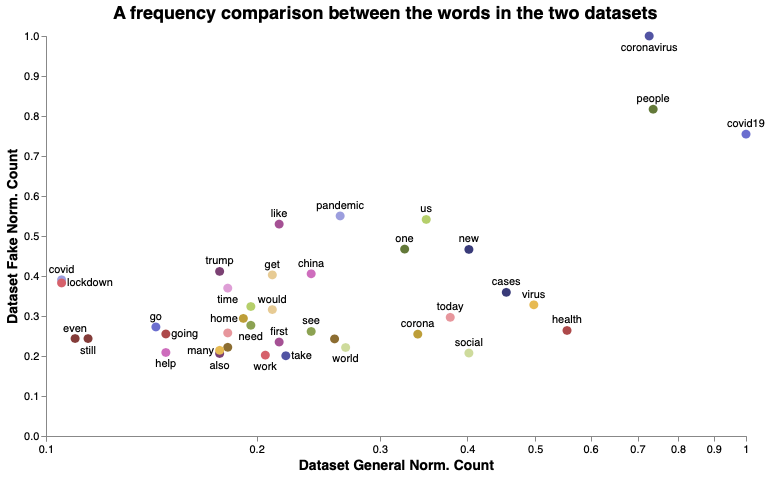

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAEAM0VwAjgzjioAT21Q2CHEmVjx2pnEwB3OKe3042t20VZCG0aJx9vf21ZJEwkCFcIaRA7WVlQsjQBGTcaWXo0AHYABiKZeBoyLDQAFhKZJAZMNggaAC84NGSkWSTo2LQAbVBxJAQO9DYGRQB9PpQZYiQAGxNE1CGQAHUAoM6KRTIl9KSAcVM4RWXtAGE2Yly0IsoigEZqgGYBWoA2b4BOAAcAm+1QEf3e7xkADEkABrXy3e49VBPEqvd7-AHfd7ozHYgC+UlA20CaxACEm9DccRgp3OlyWNzuDxRzxefxe7wBBQEYIBRSxLwATB9oXCEczkaiSpy8TjZYCCUStjsyThFGxMHAoJg6eILldESynuzvi8CkKRQD+VyhQUeWL4UykY9nt8vgU-qChUUPV6BELCcTVZ1QrptWoJHqDYyjVLKJzubzAQKzSLakLHRKXazfS8in8BAC-kVqvnC8XS0GVaTOnAkaYoB0ZGd9QzncaExC-gVhRysd8ikLuVmO-Giji7e8e0LB1OZ99qyTdugGC1xBkW-TDZLXUUCu7eUPp0L3tVzz3R3G92n3sOD73T-eQUuQ+h9W5o+3r6zauzEzyfKpi8V67r+vwfACnxmiCXLQa+tboNYGojPcihrl+O45k8Fq4Xa+F4QUkIgDCTo-i8CErnISA0Es5iYbGYGooK6avByXI8t8oHYW6AhniK7o8vx1S-JRZJjGk8wgK2MZjq6Qr9r8Q7cgKnLVNxnYFuCLwCEU3wAtU2m6fpYmdEwyhwLoxxbm2WGaQIBRlt8s6etUQpFu8REaeOLz6YZ7w6XpBlGYGyrLmS5lwHC1nSdujE8ROZ5-MOlp-L8um9gC3l7lij53ty3x5QppnvqMzaxbZ8Wab8gLAqC4Lyh8XEkeKcm5iJwUBcZnU6SVcg0PEcTlTJ35MQmbxQe5nzWgIvmOQU2W5ryQluSJDl8atAh9dYSLsgxbUgS1ZFjTya0rQJ63vH1tFLPtP6oqeyVnheB77oeWRHdmmnTua-IAkK-4FH9oXBohIAQDgcBLLdNmyfdzylkDHXFoWAN8S8h2kV945Dr61SuQGeME9tu6w6NPH5gG2I6UDXpEX5i1PNORP+j6fpbWFb4YOYODwJIZN2Tj+MGfpKMBjpAWY618NogqWLyhiipXZzYMSMNcVtUzU1FkCc0iWWUvHTxIkWnORELkOBR9eIoTq5VmsI4W-yeZ6JYfHplqMwjq2CRtF1CRzoNUfWFzmGrd1jfmiMi9afyoxLXs6d6LPJ18ALbUsUX8xVcNjSUTvgvaceljizmZp9DtDn1MBIOIuwC1V44HryumPae56GQtFcyxaKeE361R9foRgmOImB0RHCUFsCheuyXHvl1jle+jBkHQb5a99dSgST5p0-O0Xbul573d54jrN9z6i4q1RYYRuoiQN5Xtr2rNprmpahlexO-t+2dfF9UON0XeOMC4u2Lu7Mu38fTzlNpbacuE+rxDtrnHibdnqd0HM3XkXtZxy2xLiJW1da49CfjLByTkXJenclBLyp8ErYh9pdJhVsb5kggLXOgbQLiPxzuTPewtkZx3FujQ22M9x6WYb-figcaxUXoBqBglRKQgL3BCQyKUFLpX3C8LK9DNIY26v5QKflwR9XhHAHAqjWQYzSh-K0Np-r2kTiKfu+ML5pz6hhMhY0kqaLSu6HRzj9Hxi+PghWeIkFIHDNY5iaZzxsQAsCb+KZ-qA2BuyEGciyS6BWLE54AJOQIL7LopSw5v5giLG7csVTSwUTYZ0awCAKTZxGoLPc6CO49iwe9aBRijJBX8iTJYpC+HtNzPvWeEDj6L2lnnc0Hj3Gp2VkHMkcAAAeowcCZ3yYlDR-0tGBMyt-c0wp8oPjOc+Pq6pLH2DgLIfUEBeFtMbnuN4nwfiYjqmCCE389IRKVoQv4SDkDQ12VTLqtN8YYgMrMo2ml8Z-19sJa+qzOjQGWCg-hPl2JJiAixUUIS3mEPliSl8DT0AcPMjQXZ0chHx1EX8slAL5Z9SYJMWE3RJgIFpYI0Wwi0aS0ZkPAIcAKitI1uQ2ckLizQr8nC8RuZdEAw5EDAUKrfp9QQKEAaWpFD5N0YawpxqjXKoqWk1VGTLV9TSNANc8RRkvMrp0l6PSW5-KRVIta6cKUgGicoKAtddmQMtPnGenk9FLxlhjJ8BUioFVRdkzo9Ba7wkdZKs+fLY4MqFUSiZNTKxlmnoWkmzS6BjDHrs-8HFkx-XicRKNmaBmmK6kFauUUlj0BoBcKtHwvh6S+SCH5Da5lT2fPGi57conhn1T4qeYDD7zygXm6URaKzVOLcC31-hFAjPyVQtyHkiJs0crggGsbJ3nNYWi9ABgmyVrnd9JxPJbFmgtCKP4Jyer9NbdepN6A7CQ1nWM15uZ1HJQOQEjKui+lsyWW4z0ibwqNKWDRBAzyM0JWwa3E8GDLwrueFk5DlLtl0FpQuueIaFXL3XrBKCwIN5cj6jDEDz9n1vzse+r+BHXg-pMZ1IjXMICYEuKEDD9sZZ0v5TmjGfz+PGJ-YJsGmdugxSdTLe8qluyPkUl3RtCV2Stpbfx2RxHwYhwMLszThTtMlNyicgh4T0R-rM0ceEE9H3jms0UnsdnCrfzcucwqly41INiGoYTNBA0sfU2fCj0yF5MvXXUzddT6k3r9YoNQugkA6l5UjaTIjc36b3sy5lNqTDgulTTWV9NYWJxEoCpz6X-0gFCFqcQ8RyPhsXVRv5Rnv2DMLH1KKu76Keb3FRsNB9I2joRaS5rnkom2COBuXtHyB21SHQ1Jli25SAMUVYibuZez2j2RB1KvwAsoq9YJJDXM3AMBrhKiTkca34viRmb+QMNVqotZq31BgIAME7WpzDe94tH0Szxic8nm3BVM1zGAFR4DAdiwZ3FgFUn1ugXBBjdHaOD19UgHAdgDAPtY5JrNYtBWyZhwNhTQ3EdgygPofLMcacSzpyVnGQ2GdGRa2ZzkwaZnTcLrN+FXn4eM-0i5rmcR4hPLB69qe1OBVc7EcvPbTW+qUkinCXZZcxfgLdonHE-2-u-b6vYSYdddklgdwWJ3juOSJzK+EjObAoCwnZ-Sor3O5tC2RSwv2NrPDbPG5TzNBXs3+815J82cDYGziHMzqi1gzAXH1OmlXBjMe1uAiKEdku3m3a9T6jLyx7DarW8d1E7z+01SBNt359P8dr3b0x31mdSBLHE6gvPSSPvCkJTzt5-OBtp-YTc4BdfKDaxmnrEEhizeDeM1P9FFm6CR-RwImPnPGUw89edb110Rg6nUN1g+lGZlycteq9J6qlPB02SthQvvCu0-j2fcdIXL1E4yzIAMBiHtx6xv2hzHxsQUgW0VhgKiSgGUCsibH72xQkTVxk2-ynm1wWz6hEyijUFryjwSnA38W0WOR4z-2CwvWCyiXuEIN3yFn33V0P0gPr0Y3o1Xjxzl2UxoFIBQPGVRCN0mRN1LDdxl0G24Kom2Sii6znxoU8jvF9Ecl8lnAl0VSeBFGTzNgQTtGY1cANV9GqwclqxhXUgI3NGD2kQ+GuXsF1Dn2UmKBs2KQUlKT00Dxykfwt35C3Qy2pAgFpHsJIMgzIJgx43dm1x8Nax2h7XsJdUwTendR43chP0sJEhJiURgH4NA2lEhyXRPlYIRk8N+2BmfzJDiDTWDSYIwIqXEMZ0kJyU8Bi3By81wy6Vemw2+ya1gMcwANaw8DBTnxHz-Hz3xUTn+F+gf3v3+i3lG0N0HXqghFeCahSUtyKPZC1XKINQmjvD4h1lmkKnxkTk9AmK8IFBWVa3gGWHoB32aLUXY1fXsW4wKKHGSzXVqTLGrkyI-1jy-3607w4PYN110CQJoGWHyUlhKHQIDGL3UOeFqFeILTdl6LMy1GhiyOdVaNdQSJwSSMRJS2Sw33QF8kHCKG+IP2K3cJRD6lIDHlohiACHRI00xPiI6KSNSzeJLV9WE0uC1FoCgDJOYIpJLwmTx04IBNgmthiHUDBMGLOyCMu3dGoxlmxAti0InDCy91hBwFoixQEMdjAIS2XWeIcKoKCzymRK5hHhUArTsKIO+j8WCKOVCOeJH1SODz6jvVMHHhuNz3HBfhfXfi40-TZI5I3ULEiLM38JUEhhzwH0YI50FID2FPrzlHdwtLBmExiHf0GMMOpmMLplMJSW0NVMT2tgYAQBcDR1uJsXzLlVhUpncjd3xPeJqQjK5kzieRFwXmNyBgqXd26JFUUDGCrN9LeRGOxxHxhIxPFI71XiiXMEZMjmqEml2MXwOJBCOP7MiV9XkBaDIGzyvymShyNMpOlFWKmJVVKM6CshGCaNHKVT7U+S2wWKnOjST0TxTztHTKohywGLtL9IdIVOgzUIxJLJ0LnHuzBiYFyx93sKb2+QaiWIxFwV0UmJOMvOuWUGQEUB9LjIkVyL6woNFPYMJyQUmEUCbDmOfOHSQuamePcj5zh3OMjPC11OyPnx9GEN6zvAa3fPAstkJJACWC92WEXPnQNOPPyNPIRkJ2Irow9IUFyC9NBLvLwomQItvxh3QrWLbKgoYFojSA3DEs0jiO6WxI+mNN-2oPNLZShjuHuQFOqLbzFNkoryiJJzoBlP-I6WZLMtZJdKYqYutyYAYEPJEMIuNLQvPN+kFy5lkBriYBpXsK4vAJPOTIRngTAoXAUpwACEwGMvHAJWGKSToukt9CiqtV0WtzHm4HW0b3mOHTkz40UxsKeSQDIDYuXihN+K0vZLxO-PYT1VojaClKjGSo0ogLKpKAHgQ1ZmuTYCOEotlOKHlMOQDBSQqqiu2nsAKvwokryKVPmRsKyyixUClPoOrPr0fM22bxfL+WssoN7EwrYCANGCs18vaN6QoMLX6vLEgvkWe1gu8psSjm6t8kTh0hcv+JG2BLyt2tzHgpb0amQqSNOK8KvPQCskqFtIYNdBqwLPlQbIsrKuSmLPfIGsaQCAkCklxtZFsxcIHAcMwM7Hcn-huyEmYq5jQm8WBqeBZPemPCelfN8TtEWQJjZjDyDViJUicN8wZv8xh2KM2rcrMwYCQE6plimy4pAqp1+s3SQTsFCF2SKsSRrVKvSteD4pLIpvQFkC9yaBHLUsEIasQveXNthNLGbJ+unl0qonMkmGxqsxlp8x01cOgUvj7kAX0tiEdtQImTBpYKmsCpat9RgGaG1NiFUrjo0LzKhTqzcmZvHDjhgNTLeFwOR3EFhGVydrZHHLrUnO-h+misty3kmD3TkIbNzpMIVoKICjJs-PNn+vYWruzrZGusRruqPyhpco9JolkN5trqHwnKLxOXgzg3Ft9ANpoGUHyscrj3urjUerORtvBhsFcArs3AXonHuMDM-mDIKJjQ-P7qHs6AYH1HWUhh1AcuSoTqFI9pLhnLkuIVJ3OFjNHsFvbixP8ukuHFcsJxPszKy2-qvq1oXR1rzmfsyqIiQXSBHr1NNrxWXtHymrXwkO2mRzRL3p6uNJIv+Ogk5rBjvgv0mHhtRH9I4zfTvr+Syr4pGw-ouBxsurHo2wnsaooOar5wxrkFjr1JPUoUKmoQ8ndsriBjgfx0EoMBcCgEDSoY1yZXX0Ytmnmv6KzvwZSsNKkotpKDRuKNirBh3SrouvvJNFzJlQJoMhSTktnPNDCwYFkFwvAYmrSo9tMOlyMgUsGgoovt0cTqsb1teOqrUHZTSGzKvurUIfrpXph1Lu6MahFTfrAb1NBqqKKwqQnxM2rnLKlqvtOxWsAsOQqVmtTncS1VoiBtpqupEZdtb2NJmvXtZjsZf1GB1ScZrshJKeoaTr6vZK3ngB8BkfYuvrtADM4y4aSJSNuxfvQFWw6uUFGfAakx+L0Zhy9rDNqXqLMiQEStSY6e9gmeOeNInVNKuV9SAxrjwDCu4smots5C3MBAufQBDhexroxnGYTPjmUfhiLxyf22J1kBB13p-vudif-oMfX2IVB32bMd-qTP-uVtsaHgKbwcWe83pt02gUwdgQYaokuM7QCIXpbggbwwPELvkmxEAY4KkYQIGgGgNXeyIa+3MILHKeMl9rJGiA3AuBYaotupordugTFo8UErEAKdYcXv5cyeIZ+bXojsEocf3SUPkdcnkMhbGhgR0oBwywgGEpyCxcWcOfJNxZox4YHo1JAcKftaCcsdhOFBytQyWqvodcTNZfjo3r6b0mtk8HrhQeRb-pUY2ZPwBZAAs0qPBf3qFYHv4q-MAVy2R3ZTcCODqqfNlZ2xOewKVCtdyqyzVaZbaLdRxJdIeoetwLYA8AWeXi9cOqnjUbFNwKmE612XYYeKDJOX6eadci2ZADeGEwCHMGQdubBb90meTLC1U3LKrTrsLy1f-qad3b0N0EEeccI2DrJbDp40ci8eIq8XEDXHnaEcXc-weamsMcMcGfFe1G6A1ujzTeXdRaefjRVq5gz25IYC-o9a6tjadckxffXzfc6E4oKBibjck2TskdaaOBjoCfwZxZDYeibbNJzbGBraDacvoumYSd9W1VMftZw7+OnsBMo5oFnCQ6g6YijtCEeWI9o5ObVK0IUuQnA81tF21oC146fpPvgEWrYFUBiMDc7bkwJzoeBGpfFY1FJ2JYg5-afascc1yaBT6ktG+BY9w4ytDNOf3GOpiA1Gk54WM+FV9UCSKB5SRa05Rc1nSPbqvpd2dx89d3MOSgtZ+zZTYH8cN1DXMdNzCPxf-EA6guAPafvfSax01eFoSisrNLORU86H1HsA3aXpS9xyU84KTd0EaCmC-bS4+vreJotsC3S-HWeq1GE1s-Gv2oirKp9BsfSW2ozoWs+dSu9eXnw9-3IdrgIMvoXZI-TZob0+ayHlQwm-vYhXxrrLcm4fM7XUndyvaw06p0g5M5KHq8PqnS5KQHMF27zlqfO1INNaw29oRLg9toGleoDcm+4+NMvcAet2HKi2qYXaHdvo-W-kHDRYE3m+7S4-27v20ovKkZaHkCLZuoQp6bKoCgvM8JPpCoMou4x3y63dS4MUU+ntnuhnO7tc06Xe07xa68tUe5AFyTJ8W6PZ7IG67b3kvXq7FeTRC7O-BK+aEMLDMIKK0X-cy5GziEPbGYb2LeR4J58lqObS5-QByGgAkHXDs6PzHb3d9XEDyvpYXdMs+sSLI7M7eKV+SFbe1Rpvvam9-fc65MpH1-vdQZ63QYSlmnR6mPm9beBYOfk60okZbTh9MCzMR9EdLfooy4eoQYUBaDGrk7a80pdJg56knY8GE364sbZ68yO8nWtyeUQCYA8zSfHu6bl4kRZV07xBPoZGL4N5PecPJaSK6JyaTdy0jF9-wYoRUIUcPVoXL-akC7+mtk1BoF0Cw89cT++bxdB4Uzp8sSUu1X5MGOKa09u4RTDZ1cEuHjMCd+Z9Wqgx0Td4MT+axBPpJwj3eqejrfMpOSj6j+pO3q8oXau4P6uwoKr66KTdgBok75Jaq9v4w4zm93SdgYG2S5Y72zPCLgdXur38RuDvI4NEB3oT9K4LvGbH8hp6WtWsyAFAfDA1wPtY8icbwi2Rma+oMY4KZQs5F77yE6E9Fcdosli5URgc2jWPlf0gb81jeZVCWCHnZoRNJe4DNAeLkbr3cSB5vBoPQACDb42BzLarn8lF7UFtovBYapgFwHftKebnaDmJ3AqAJ7KigcQDaXBLI16qz5dfvGFKRYNM2gIM-LoACDIAO++SUvtRQj5lVdI5ba5MwEWoGoqBxrI9IoWSTmFvGRPXyNSXsDsAea9fRwiHT8xuEfm8TWpIJQGjA4bmiXRwSWxR4W07wT9CwaAKhjnUmeYzaAe1ysZK00aW8MbpALGaCCI0jdIIUT2typAgcNbQ3rIKSJWFpEWXdADAB5iah4ALQGttLyR5I19GpDOfu4P4H4Nw+ixeVjxjShl4VoHQ+ngEG3iCc84APVZkD2b4bc-q5iAIJWQ16sERs4wxZgMMmED8ciMPdCgsOf429-eyfTAUDC1SNBRqf-DtlP2CbLxdWa9LevCH2FcCeBPAxrmKheGSZbhU1EoSUJtRmhqg+Qg5u91PLbVb2-QzdgSjOFshPh4tM-AgRkIVcn0yzDho8Xvqo85hfsQSiJlrgQBtUSuRKhh1UGq4oeJzU3niSTYcJFAqvYgEKDy4at8eGA6Lv2CHihAVhDCcLgRW-jFgraSeRgWqFQxrgaARfHEfGXUHIcz4Ww1LCV1y5wUy+tFYHiMPCavMNQNJMPmXwwHgjuuZA3yL8LiaB8wevqQNAYFK7UdQK7Avyl9QCrkd4h-HMVKQGNqfYCGnEO-i6znCSjOgbgGuPlQv4GpGapLYpKiJKBukpECQzOrSM0igjaulLRPCfVtTREDAgogxKkNl7cMS6X-baOVy7IC9XeuOXPsFhPqBpb2FAo1oo374BZ7hQY9ANBS-rKB12LnRUax2wjW4+8bAA1HKXqZQZs+8kPSLQzFKCV1QbAPNnQAqHgMoxctJvpZTZr-DrcjQaTi0GSHM8ThRostrN1yZn47aAQC0f-QPE5MSY4gUgEgxzGgI3hg3STFoItgLD7RdEK0u61PH29fCUMJYJx0-HQcESfVOnvej1RVYu67jNbkkVn66iMseBEAvYSqG9kQycQ83nYDUBek1WwoxPqOJsQTgYWRCG0XcloDXjiOKY-+kPyfxRJ2smfSSjhPrwmj78SbbUhcEsytdr8WfJlM2Lp6YB+2hopwekJCYTjaGCDaTsjnlFvI8xQwrSp73QpSMcgSwdDP+LY6+oXASwWgH9xSFdN+JMYsNCIJ+p091QNAMYIOxvrrCniHXdmsfknZv02AwJU6tcKgFwi4mw3ULL6nuAtAjhKjc0HU32QKlG6PbDeCfRgSkk5CLPQ0hDUZH61KOwgZgGwBeAIAyATAP4EpN7Gp17kHVFKXvDaGrjq4EgE8bEQAHQMfmvIrAWZnklEdMpvOctgsJeAZ9AipkzhhsOeJ3gh+dPOqWk2RE45xGlk3gZR08CeShO3ZETjxhakySgYdPUEsCLiz3i6JCMbKe6VTpnc7aU08SuxNon2cMsxABam-S1CycF2SXAvCiLkGWDyaWqELlnjiCVSJEKo5LEm0WDaNbYg4nyRdjWqzT9wDEmKrgWUAOSxm3fbwQ2IUJfpgBYZSdsggkhXT46YTAbMxhoA-CO6oiAgYSPSoBgAx6pX1GwCYD3BpWXYx9hoLizijM2ZQpMUXRmlHFIp66dtEsCOwL1tiC+XWOuSF4wMBQHPY7lIzUDGTBiJqLmaan+hexFYBMwcAsJ4n6gaJMAoikV0Yzm8mgNsQOghPpHPFzwcQ4sNcmc40zV+lPUwTeCfGmwDa2oFSoO2HEhFj+fpMacDByp5UDCtvBODxjBD0DU4glbCvCERYl8tJaQmMTpD0nVJuJUwCkLRAhnSg3R+kvqCWDRCiyihZ4ysY+EEoZ4rIQ5ecUUyHG+TXp32QId422qK4HBXwLOaCBznZy+IfMsEBcL+yXiCCXpPiW7OGEK8uodPT4KHJxlHM8ZWBK0f5CkZ3pdBEPcufmOybyD8oLYkAMOCBD+zJa9ANVsO0-jWglmwSB+s5CyHJ5BK9wOAJ+HsIHTh8WTF0nGPOjRzbcImYma6GE6Q4jiH0h4b6ixrlcmhDfJcWe0barirCClWgPH3+6GynSxs4lNBL7o2oaQ7KdUQnzWlizIq2s2cHwygArAWgXogqdfygYuiuB6Iuar6nawXAF5S8q+msManmSLaPoctq3MsRhyk+JDAKSCHP6ZxNkdcb6Tgun4fDqpuuQNHH2QhahWgZC94fdFwLih90nFDSrNM4rhsB4J9OwHXEQBRZz5kQ09vZgoIALJ2RkuwHljlmuclRCUP8OeMVCTt-Uv3EYD90DQrS98MinsXvGqmvBmM51AcfXMdYHdXgtQ2cgsKaQIA36XCbcWMzf7PzoELMlmWHmgpahO5Uk5Pm-OCGLTWg9gW8WgXllgiYFoIGwrvKWhGE86phN6elATYbQrhaiy6WxKPJ-ypq5MqpNSRBy2Q5RQdIRY3yvkdd6OinEbAX1pI-TAmpMkaVDP4yt1FA8IVkQalYgrzUkbuU2eqhGy68MiJkvEWPKallUiI-wi6H3OWniSEaWE3+YzItqCgzFXIGvopXkBjwmhhUqBegpvk3zrY5gZfjGy0UHcPZwMtLMF0USVBIe2yplGksrBJtLi9wOvjbycn-0zl5vCRe33jk0dAlVjRVs0z7keS7abgDRQqNxmyLjQLbdIFUCMXBsNprWI4NjWOXdiTFzc8EHDy9zdoVBOSrTHkpEX0Uj61lauLqkkHRZrljk15Xi0AkPdr28gRQIbX8XqUKlkVLhV8N9QFMWJ2oF6jbHaCUqci1K+EfSr4WKBFgKwZ5a8PGW4KrG2Q7ISNgzw2AwlztbSVqJ4zPNjuvc4Kpsre6EqaMHLWSpGzcBqtwq+8r4GMROkD0T69wa3kex6XLlHEyzPVfKt-wLDt6EgSVXcxOX05T+5KWCTzF+6k8GFD4s+EXKtSkqeETQELp6remlgql3UA7EgHuDIqkl2q8hSh2bq+rGOmZOGYG1uWVx8wXirbs0HG6ciMm3ImHLEpRSTs2xsIPoPyr26OqDhbkpSoYoXp+DKBB6GhBMp9Y-wrVcaLljYAMGgrSOXA4kcJD7m5UPJvBEZRoQcSTyVmzkM3Gcr7khiLgMhf2YUVaUHJI214rYgQM5yaybEPIT2XUjZkKAtQbK8aGZInn+k3ckc31tunsAHlwFToo3g2y4GFK14SbeQCBPxUFDU10HShTaO3pQAQcofQIk-OApMpaVGIrldeLH7doD1YU9aTx1nlP0S5Zc69TIMAHryhJBOZkViNMD+FNQQauTPGsmLW5sAubMtXnGaHIapqn3dVXCzSD2Dl5nUhuvmv1VmwJONgdqsOvVa5qjpJzYDbAtgmTBYA7iyei6QFmWwEGOpTPAbKTmH9yCjzRjSJrZRTB9Z0a-nl6rHSrKFpGWRABcA6pmB7VGMZcjsWmj0z5oAWUQS2WAl3IDUkkwTdJV6g2iJABBEwJBt3HaSTkmKoLKDIWopN220aOjWvPI2odTEDs0II0DY0OFUVl89FVwJ9X4auS29UwDmuS55r-5sG7QVyQKa89aNePTjfRR1FGZrcB7LPGwAfn3tFxodSLcVOJUtkDO1QMCW41W5vSKN7eSdrZKQItcf5yS8OWmrU3MIFhFKrpa-FNVIyQmLkh8MxlA6JL2tMaxhd6oUU4FicRCkhKxJTUqqmF3eMVG4qU2s9wVZmFJpBpNoHSN1qIVGDAqQQIKosoW2WmVrKQvywMG8v2JOxlkgqr6y3WsvnWiUpaFw3Ey4HZKVU3COVVjYTdm2JwPT5lA06aYKtjVnxP+hY83jYOhitsGA1MybmRK1yBy3YQ8RoqRP+0e1fIqGx9S20zqvqFxF8q7TEI9oAw0dm9HXrYLKX4MUFBImoS3yawn1YgjjGEfg2wy1sXowPSrT9RtTNBbF4DZzRXK0p4aLUZ+LhLTuOG+bt2y8O7TIhhrhgdQWOiHdNoMzzTmE2KyoHuok0vSpNzpDrq2svQLC7a89ZHdjq1wjbComIlYPIEg2FChVqLPHXjhPrhgV19U7pYDzQU46q5Jic3iMFvbGq31K271VbqTZzsIAHgGuN7iHnE4gCngaFf8u0U4xGtnBTCvwvLKJ6G5AK3nPcos47kBoWY+1dd0dKAbpJ0WpdW5MyUGhqRUgzbRxK0ph7vu28hLYdK6lCbj8nqD0gNFC1NKCuUE1OaKSkacUQpLs4wSLoCpi6VUI2KYM0Bw1aVplHBCxTvXdXSCb+RU8nfgo+AldUMmq+dTKEp0n0lEJCIPULpl06Sw9wE+zcoBCr7qBNYjD7qjN0JkCBADShJH3oFDXY-m5vKjkcGK0mrGlyIlJL2sPReIyA6yWPRlmBD37nBVjTvTdj7nUi-9vynyhAo4F3r0Faq9vLMohhq9F5oWq2Y3MBW+omgHVeZg0sUiBihFTayuPhIWwn0iOHCDKZzOu25LfMMYjEJXwBTRya4BwffTKFm0VtWs0QYEjRCByQGoiMABwDAYEnLxAdjkcxN9oPYSHIyiOqtmDophciTas04+hrqTYGAeJeg4jatI62O6O2hYmAhcvTqeUjgvimjctorVgi0xOha3IoGUCkBIN9isvcn3uV9RzQe-YPY4ZXY7lbkWWEsfXug2RVedXs-jjsGMP2QIl3derBQW63zDWq8QSVt5vmRWaH9qSpWbDshVPb-uDUhnRQWiN1IbU7hvaTcpD3iVt1BsZhUOVyz8Gbp5za3NvXUMorLt0Q0dqkY2g6DLNrsrucL3kMs7LgveVNjCsaY9SmEk7QNLYBoj7lJjSeg7mWCn3trOsSlHkpfi7XTcnDIq5PH1GEAk5a4CgULaVp6NACLDunZkezN-UbaHDUxrjVvzpUZY7aRHNQL9qgEo7o0zu+jE+sQAkJddN3bwwUoOOJ4FhOQLtCgaWj1rqBvg6BL4d9THHeFpYsZUIKgl-HPgNhPhUv33TgT6tJnI8BEXmonV-9gRp45ZQ+1wIFhGySGJ1kF1mMfjP+YJXqxiD8b7CnOw3ikj6NngbC6EinC-28kl6-JI064wrBK60RFJuxu3o+LgGH1cpbh-KY8ZWP9YsDaeyjkgF4M0gyRMhnSUbueaS1PDJRkdmEQLU+xguKTRZWgedGcCrG6pwKVvDoBp1GgXghtb4LZiHbD1pmvndukuAfiIjKSn5k4tNILC6IOPe0pJqNknJ3lbiUAUVulNj6ZeHi8jQMv-jW5tGHannnfplNU8vxwh1wDRD7zAnS9R-Clrlts2wSjJjJxZmWPGUbVyjJ9XXnvtzNEGqpghq4ehH1BQwVDXMYtUAVtz27mTU8HuS8ytZp0flJZoCmWYoKfqMslwBAJymiCqzlVQR9QjlSBxekpSfBPU-dVZP58EuzPLkx9TKbf76hNeXVNsfJPgMXtkS+VAFnBM6Fz+2jW9k5pyOwGcd1yOANJx2Rz43tndSFENodiFI6DQhyMoGmwCzqhzFu6Dtxu9DN7yePcAWtyZGlpnfYZ0hkLuanpYmws5OMgPkEy1aH29JDI+X3JvasiazqAnVegJGkzH-YJ9RANsjYBztKLg0usxifooPq8cq7YErslf5PzvsIrIKHqyiiHmpe752Q9GmdVH7uVmZO3B7oG1e6gL5Cak4AtTqeaIzd41XSpsJ6jnuQhLSqFheNK+6w1eor3LHwfi9mwYYwCkDhSMtTUuL9GE+sJXamPyozDi2VXbLcR9y70sIDshAD-Gtmc910uCwGEjbxGzBR681a-FwQHgKz1Y+AN7iz3GK5Bbmsc61ktAQgWjYi73soEkgDsgrye66Tld9SuC7QVlqiBTsKQBgKrZIN+oxeEpzt7d76qHVwf06anILWRgzBJZjGzRD9jwjkzTPlpUGtMNBvAYVEqqW42Zdl+wn9PdONibZFegGOIv3Kio0TbC8sURTPW7q-yC7U4TKueLNidBxAefQrNIt09dyY3XloVZMWOWPkGZjQwkYJNvaAsS1qRrCGbMGoorY6mrrCTvAdn0jXRqIfLTJ3OovFglChnFNqt7Aithwc4yTsuPXz5dMfLEd6VOv7GAFZ+TMtDE0t7VtLwa-I1WGJyk5FqzwtfZArtM7tzTIoJNhSGpGhbbzSRyCcaXqPbDXmadR5PZasZb6u8leEhWwAeDLyernE867riAx5D0bcBrXlryQQLktQK5+9uxfCrA9N+G9cReIBsFDlcbVK-G3Jg7N6L6V8QepYRY43EWrGLxtWyTFAK62oJTOhbFI3WRfGKTqpldIAk8CS3yJU+9YvSvJvoHfrDsdNY+asEqSKgyx7PUVdzBpQKzglIzjmUZsQTgezqj+f4EDVC2hjKZ4VXnqTayjLgyOBW98ZgvKiSrbxjuYhvX3LKcdoVqRkBjrE98fBC1hWT6ZiMO8oAimhesVSIsmcfQqlpRRfjAUqnw7Oyu2z0SAU-jGwxewg8FYmStHzlLbWyxqCQV7XNR0whWc4Z7An0YpIshS+OtKPNTJrlVQSn8AIsD2UrzlP4+nvh4EGWrU8GeyWAuVStWL2R9O9Zp+bbQoYcAcyM8JV2mHIdY6eUxclym1jOTyFk80KzlUc9zeXpD+y4BaNznWs4YB46ucpOcqMs-tboNQsetaWf7auvePAaYR9zMAxACAJcDSBz6br22oTDHWzXS02DpOiliAZFDBy3qad8fcMYxuqW3b2AbWw9ARsg2IaTe7vNhrjuJGE7PGLEAw4I0dZ7DtzUFlbK9NDhQL8oLlsAWodJnBhL9nHViYciXjSucfGEw9CWWU2uqqe7xb4TG4RieZlj3mQRktBLW+oxgKLH5eL2kaN9zqYu61n8IWbBiwtm2fvcmJSN2U2AGwPwepsiRJ2q2ULfTtNPNS9lm3ex6sGkdLc4T9dwGWETQvrRrBEYCK3jX+l98FCnp4HrLdsBNBEzMj9WY+3ke9gAbcC2wHlXMeDFADWWnnU3YqMqSddCE6ixxZs2fBpbeMPuWQFWDf2ptOlv0ruzHZ9QI9-Wne9E76Uhm8oQsqQ1FD23A3KDykfyYo6JsZZhQWxfTXTP2LGawiehgBK8w8EDR4AkG-ayvai3VOrW5ZbCs494fLjyN0lr6eSMpF6PvRQxX0f4Poqi24FZgB0dGh8eRUuJRT1QCxs+Nc3-6pFgUBffMDFOIXUWD2x8MbMYx8+8L8F3YKRcdOhpaDY6WmJ4Wsapza1Gcy6XFPOZS0NyPmKAqvu1G94QlwLb4ytPEv9dN2s8rGbZgJC64Sg+FqJShdpqSpx8kuz9oRZA3hFPdCyRLNgjf8JA8LKRSfbBUMaCX1uRYHSWyWcnhT9i162jpLnt8+LIDm06Dc1qvPW7iF8Hdg5Gfj4pXHwc3mALyrZOQauz1ckZsOI2zwbWqQvtUYLs23fnwShBkog6rCYhnym4NU-uwbE4IAGLkp1KTxVk8ldOZhV92uCOwTLgnWbVJg4knP3cjcTRdZaDDy95pOvt20xgZx2smpG3QajdKUBckbHn+Sn5m1blhMSBbCyot7ev9saZ9zO5GIKfqKbDWwtNmMa3nD5DQ6R7NT1QNlZ7tsp4u3y-Rw6uQfc2w3X0kHBPeHMmU0rrkzaf0OBcFKGHDBgykTuxZ0v2zijkfog+d5Hu3kfji1FIz3VGSsyTm8-X8kH3ikHratD1bNeScAzaBfSg03lHsfJXFXNDAR74RUTkOA+KfFudtBX2xvkXcps9QZeXNbn33ibvYzm7eth49UNeR+3SLXMfCs78T+wFdZthmucP876Fz3bRmoOhokGxCWy+eClxo7iu++P3b2vonlbZRme0PDG4S9sXKH2U2fCOvE5xAHSswNw7ncu3emoTpNmSM6wzopn+ImZzpy0c18vHfHvMyCKWsWKbA0hM9964tdvTlrz7z4KSP7Y24CmLRquxsQgCwhR5a6wUonF3fWThP2oWPvYBXeF2p4YzyOgXrkumv2dizfi+5YaxGfgQUjCgBzKvouOK7lcIsCO4lPW5cqwlWgK0DE92ek3RKlpw0dTrmBZAGodZBspgDCUNQDjre89s-d5Pv3PzSz3ZoBd+NsPmisjx8PBt09Fgrlmo7h91o6vNTwgSQVGrUenCTkXngePNSkdt2Ih4Wuh7iUp1cv43sHs+KraVbodkDW7rNx+efj63nLmpB1+yp9fQLBPGWNOhF5kcy7B3aCcEKjIWE9emAgiib4jdR5ImMs+oCgGoF7wT3r7Oi4D61miTxvtvzwOa-CYbv3fU91dxodbf0+N0FvycOYxIBnSNgGbIj+rbjgC1AgP5NsHs4Gc61U4jn2Jk+SxPKHQ30AFAalOj7U9tnrpoLlSTEAiyolUMBProL+rm8338PvqFLxuAkBJVSfU9ooPoqmA9vJ+u34oZ24yyoYKyLR5r9YNsHyfBtHqC2wM2LFuGENV9fbfnnkfThMvbUugGrUScmrt3FtXSJgL7mt2+vMjtL6U3PZ3WNVFIpABAbA-Jas2cGkgydZxdK2kJzUjb1O9EvButtVxuLxS+7xZk2vzPS58sTdcheXV2Az9k9JFPJzzCtoIfjMTgAlqzuAH9L01+jt08CgOAfO87cHt0dz7Jz7UsWdt9BLQrODdZF2mix0+JIoJB2in9Q94s4HZmK5r+bVlOvDN+z1143botrRz+BwSrBj7MOSZd3bfb9bK64RqxmrF7qksTg6OoZSvSDiT0nX1sGTZROWHULAG1Cwgu0YgOnzgCmBJCWjqL+fh-Tn9k2WHyZjR8vCrt090Itlmtsr5Kpqmeb1yat7j07t+a4mXt83pDVDR0-xBadZQHaAvfBvTt8AxM-CxlUMWvWN92vRr1W0MsQyUWBdPMZii8jHDTGHt4vHchsBTqFvwX9c-V2zS0gMdyVpcOvZUWZ8MsIBwXov8RGTdx0-Lj2TVbmcVyoMDuDED+NnLJAEXtneTp2qERpDZzLouVYDjUAeJDvil0KeRf25sXnQHFb1V5WXU1p0PWLRWx3PAXxx1F9eCFeZUMRnn5cZYHECnUoPRx30Ji-YoQo8FhXXk+N4fZ6yiVV6SH37gyKMYHDgNRaVSud0qKOAN9FBCinuNfvVxhW4XrE5nF8anIl2d82PV3y4EbneBwCAOqSfxICb7dx0jJxUGIHCNOfCO2lBenGalwsJAQ4GL1hdNh3NshvZchtREhRFQD86feICWBdATQNWFCbBYUYNWNWz3jtVuVKyt0p3e1ChhgAyIyTov-HR23pSnErVrdytHHQbdYCJNgEB-PR0SQ1XHEEXkMhZbUBgBdeJL2cdDHEtzTVkfIZBCMRMaszHgRA8tVgDlRXwI00rxW1X0FFffaV19-6aO3z0NNUKnP91HbN3J1sfLTzfpW7V-1zFVvSS3mRsfFnXFAVvVhwzsQmeaipEcA+9m85AQgsFWMv-c-mBIIwM-wSDcOXAimCZgl6lLsoQvc1L9KfRQGgoHAbP1hEp-AOWq9YJWEJEoM6ZYAGgMQw90iDiDDLGQBxAXTUTk9ddKA4U3gPQ2rFUMIyVS9-vFJ0q8TgkyzODWsCgG0Y82VtkLYDA9c2y8IgrYKwJ+rE+Xb4N-GPUFCPhHENaxtkehQH9f7PeH28PHTwFncgkZ6Ru4Vbdd0QNz6fg0JtqxFhh-VFQxEPwDcQoHFCA+fUQLwDK1eAMtDQdcElxcJKBz199OQaT3GN37EULEC7lfIy48dQWdlbcWhY0jusvgf0OUEEQo4OeD3Ze3yzY+5cwEvVYHEINcxRsDUI-1stMqjWMr3PNxCNVAAIz94PPLKX-saCE+XuCO+VL0ntEguaTXsLQbvTYBjjKQKIYzhI8TXAd5ffVnB0A14Dh48CDcB8A0w44K6ocgnyxkI1eRsP70yXOZ2Ppp0VwGL1WQr9xjFagUK0Epn1JSmNNPdMyWUsSNWJzZtbnCGFMBoLJQK6pkbLlm7dsKHRhlC4AtUPktkFADVJdUed10IlYgbCkjCYAn0PzMzMCC1GBCPQNzp9GAYYKBdow+oOLC8g3z1C13vLzAolpidS0hh1rHsjo8CwMPzakitDUPAibwB03D8zMAw37YKw1dx8gzpOgn-Cn7L4Mv83yWMOfF09GsQ74WgoM1LcAFQSlp8aHW7z4dWhSdzMs5XHCMLCU9CQMAJdBXXi6sTKeYPbdVhbH2AZ6TIMLI10qHEAYcNGX-hCcyIpPGjloPIkPEixgzNCHCYQ6jwnd5ItSwyw1-DN0dcVydvz1gjXPOEMgbpSdjIAhHLzk4i8adoMEcNJPT2Gdg1PSwPAMWUoMYjujZiOalZfVOCjpCPMeCjZGfLKV5MWdCujEsBBLEPnwMQEAyFlxjdqj-06fSyNTsamTVwEsbHC8AZczpfUFnCEfbwMOttIucHg0WjCnwyxrAaGAjBPgi-2uC8PQmzb4lgakAXIZWWXgOsbNQ7g4c9ROeg8DKwkxTEVKPbkP0DKAgCy8CMQEyONgg7RBFeZbCOYMNdgwlwXV82pNQF2shGPTUMi9iYyNwQ+0Li0qNQgcKPwZMg74LTU7rbOw1sXqf02RwnbAsMPDYLHyLCt6VHAFLULHbmSejolLyzgw+5XLCbBM4K8w1CHdZUJxhDQ4hDrgdmMcKS0uBVULMwBRNWBaBrQnzSy0zbO5RMdJ2N4Fq1ho+8x4CGHJGM4oVI6LyH8LfbdFlEgo493QCokHiV31a4HaFyA9oC8OUk3jSxEaAHnWhzu84DG6IBgp3JABS8jgByOQCegiV2KFf3KcMmjd0UEk7VJtENzkFswzJEvE6CJsAPDwfTXiF9WsUIBikLIJEThj6NSymLCnqAgNIwPA-aJIjlREqI8c1De12NsOpNWI-9lA8aKokD1L3WPV2MROGLo3QhYV0gSgMoO7Z0I6wgL13JHY1FjvfXphZiM-OuV9iQApOlzcpGZ9VQxvokGIzC+YycJO55zBQFFcAgjaxot6KFyMN8hoKPy8MdDUsGRs+oHEFH1zdK6Pm8Co1PFXYeJGtlQilUWTXnAfLEhGCdLggbyAEGXAyAmc91C4GiBi9B-zNpzUUi35EltNyxpCPLX5zXs+5C4ER0E3IuLljIqHYNawbOKOMbi9xYyysCr4cunwIB418NtD-NOFQdkEWHFQMA3vLENO0eVc7RrZg-FGmakRI-3wADiA0UJ0Vl-VwJ-VUMVRxkdXtKJSJp+sbiNawXAbeF71H3RWkgiS5S4BmszQyyhrCsFCkF5V+DFuMMht+aIBZdozZuKWC+GXhWjZcA0+xoZxQlN3wIRYsp2+sT1SpXMjq4HLzy8CvIr0eklQnBylA+xG1lS89Y6qN+M7I8kPuRTqef0VtAgyjEG8IPeFT4EA0SeM3iMEsEX5j44+UP1FVwsO0ETipB71ESFAblhcBZYpyLkxPvMzH0Bu0OuEqirgtbx7h0nVyLs1mkaxQgsCDXCIkQa4j8jyD2qXXgdR+DI-3SJKgaOPhi01Hm3N5uWDOUoTLXEUl4CFhLDSyxArUBLBFAElSRUd8wvaIHCQRV6L6dcpCGBsNuESDRQCFgyTAli+RX1A2RRgOv3491dEKOuR9QcsnZ8YYjBg4SIEVzVzcxtEjwhwbIiZGH9KXDUEpEuoquOlBEYz2MrwlgYAlC4cySeyLIcLPqTSBDE70K3jk3VrAsxdNW2OitRozsFOR1jIeAshrwweJBM7w2rhyDEMcuhiBVY9-xkDLuYROMCizaBM8T5qI4H8IDQphK+8nkAoP4TmeOJKEjVcbH0EoqY1v1Wi1yA52eJ9IbcLp5YQUmGDjWg4VWiC4qEOGEos-DCTdispAJKtZPAOhNCTVhTsNlBfg52SnjFEmHHBiuYCRUaEfY9BMA92HbSJmJQhUpPl5AI2VW3CCwOY3sAcKVLy8M5kqmzwcabS8SbBMUBRLFjeqRsy8RYgYJP59p47eO4TFI6s2xjUA7I3UizLWcW18c-SRIb9kwrmFjlRsYkJeVSQ3nFnizMd+wDDMLNxODVBXQpG2phyPJO6scUx5nJSwnecj4tUooL3MJOIPHQQYN-eFn+CdxMFJHMtU0SF9RLIsT1plnXDvw3IbHI8GglCWEoJuguo4xOntpUrmH1BkCFkWL0SU6TTBit9bfhBwrIJaMcjaUmhkOTXMeEMr8TbRLRjjyJFQOU5mMTUhncDCWoPzo+Zf6GVcQjVr1YpekwVKG4NkhK1tgzdAEPKSXGUuK08NwHkncCDQsOIzMf1HkgZtyvGgR0kHwqszGAD3f-hmiJIiOWETBKDZDJEdgK0JASow4iIYSz4BZP9BrcePQ8Cg0g3R049LPuQhBgpQmMeB6haTmhSBE1FMztaowcg-Yg3AFN5wbE5JM6x4g4o3XDUFTcLS5trMPCiSkAgQS4CggjITXTy6FRwQTh41Hhnsx4zOGYYCrfryXipqDlwiTfUc1i3SJkRJKqpCJNwwg1OU+JNnTuEu8DdTHgkmWLisMTkOZFOETDgkSD08iWUSuYAZ38jdpDRKbiaVFmJH5kmRQJZT0FR9MBwlnFGLfi0Y54i9A844m2nFDJP9TNjVknSStSiwPhn0jV0SKLRAvksGGIlQtIEMBCTOfMB0TJ2HLGdMz0t5FMTpwd6LskhyaDO59XmAXTST1PM+BgThsXTOExcqNhIJVJUiRDhU0MkI0zgX0-BguMvIoRLji+TX1Acd7Mklh5jRknFAmCxbAdTnFtMhGGPCpxNTj0zAsmUGIywYG5BpIXvSJ1vDg04oSBTsBGQjPkKDUpBGsB3UTk1j2jcGQVT7qcBL8jU3XaQrC6k0ziPSbRd+0-t+UzEMsyKk5IPgx9FI22Ki-nDLCrpI08Sw1T7w0c3904AWfWAyUU1P00FWI1B22logfTLJ9p7Rvzip7AW1jF9aAwRxY9OA50NTibNByF1DqqET2QIVM6uM1juJcUA1DAvIeIfMXAmrxEw+uewLdkWoi2mxBrXE+n5B7E9WOCDGM+AOk57jZFPvZDs7UJGlY0y0jiBaIOjNhTk+VFyQRmAGKWe9ako+J15CU7cyMTq0hGHhSwYDZF1QKM0DLgM8YkuwrQPnamKZ9ys2mI2Ca3RmKczUxMPwwtM6cbK58ysynTb47acd2xzgozjMrxrvKYBpS-Y8jQ9jetDUCaAyon9NBNubHZJ14o2XWP-i3fZH1JF2nGmUYCHCUUS30T6DGViBbYN806zEsxdXbRD42rLYYEc9PDPpLNO5JdcnUh+nZBwk3kD0IKADDMmw30+CO4E9DA2mYd3kmiI+FDYszGQBXkrSLAC9EnTyhgGYpiKed0FOUJ20sAkYFOSBUwjK1wfsxHNhossJDIuSDEIwOugxAZ+N1iLUveFTSYIPw2EALokkLvjqE4nAEBFADgIsys87dMo5884PMGzlRC9NQdaIPAjp8N-C4BUwyVV3IFldcA4E4RWVfg2kSPwhe2LSQ8hJJcyuWeADa0Bs+vxowv4nbXwImUgOyTyzBKaDQsk2RHVLUa2OcIq8YxZIitSSYFCDiAbYaUL8T+kmVO1Q208nKrCD9elNO5DDTuO2y8OYbNaxdEC-MIwlgr0CONl3KPL6RHLBgxYVOZKxx5kOFByHAdTSE+hEgg4ofPSTSsCTKGYa8SEJhTo0sEVjzkkj+nJF3sqNNZzDA2tJf9yRMVzRVeY8nXTjYjQIDoThc1JVDU20SDOLAkwk9zs0N84HAQyRM8Tz6ShQ8c1bZa7XJ07SViAqPn5wQvu3OBOyDyJWc63M8VHygOGwFcUOIrDKLD4PPUVCBW7aQmfzRdRJObyG8lfnwTn0b7HGjq7f1lC1jzQ12B4w-LBWBxO0M+OXsQ-Ti36Ck2ePRLyhdKfIr5+cyvGvF-AvjNNtHsn5jeCvEVu2ojMfGmO-iNQT9n4i-lWgq1xm0-33ZQeSQMLgoCkyLg+4rC1rH1B3AAIBs8+WewtYhg1Zf0qDa4VjViTBI40Xj9kkzMiL4zncLN4xUM8t3MgJ4iz2oybRKYEWzECkOODNwM450AIF7Y+32l8C7VnyM6eFTAqLKhMTMRRu-ItVBJXCwf1nT6s4mH+cafCoEOC-tEQpxhL9Hrnq8fCktI-VhUsGFiB1XEDJc0KCVDNMdFYgKKBwX4krXSKkiBpKASJePIqmLdMxai9zPIn3KwLEkl8S9xXzaQuNIK8o2MzIRmQiNI83wy8IhizAbXLLsKbZDIMxuijJwlCqOF8P34TTNZmalP05JNn0YI5OLgjYMGBUnZkAdrF-5hC+jLuVCCkyHRkxIhp1WdSWU700hCkNHTp5ifdyJ3yd2VmwLA8gu9AdoWMu82SNfnXky8Sxi5nm7ikwVXwBKFDOzWEoKySaRRzViyKimyWcFRwZIDk2Qq5UyVW9zsEIc9XIypHi1Wm5VJSiWzpzecUArKIoABx0HVrzJkzhy0QOUvlxMzXAqxS9wT7MdJrsdCK5c9UQPKrcCMsvOIIsE5LLSBOxO3LcKsCFPK09uSxKjVTqoAwovil-XgKNM+0rrSVzydXgJPCCQvIoaTaTR21YFlStAmPC+odoA1AHsi2LcdhEtmI5jkytZP+LrXacAOx8CL1w6zp0rRKOpbMjLWdL+iqeA2SpGeBWUBJBOwwQLS84fI+LLSHvHpJvCgJRlLdS+aNaYRgQ-JMVnVBYV2Y56P-wUks1G0qbLTIp2NuN7AYGLyyYNAqOOpMADkVjLp-A7wv4MgiwpOwT8hOJUxK00EtvTd7Drkc9+RblyMoIyxdy5ILgEEql4mim4KvyUSDwASB7irgWBy2nb+SAKDMqeCdj-gH-QFFb8vCUY8SDNgHWQosBaheo1cwvNXLWsT0iHVlnSXPKRcSCZJIN4AYIvLK-oiRApK0obamE8rIxovNisy76Cf1Pla9O6DCcy4srhuQdbJDtawRNLb0HCodLjipxWwneA6fXcuoLDWOu3nDE7bcoytXY7gvFdvM0vFKKrWGOh2Y+y3bAWKqIKOGNoeCyMXgjBMvuTGBq8lcoDlHcyhwMNBrSAqQLyJazNbk2AWfDsKk0hxI7dMFS03uQs8Onx4kFAc-NorpAlfMgipGfMAaL9020uTz+gn8rDwmwCsgLLwGZdPgjmZX-KKgDONiHHLgCrzECrLkMQSOB2ihcT2L15EnK5Vm-P+Pwr3ZFQu35AykER1LgQqfQWF0IeVLQqqEiRG-K44DSPFSqLZbK6cLaFlhUCEvGuD-9ILPhQfcUq-F3BNZlSBKXSwS3pTeUjc3IKE8kmdgE+MbvC4t4KhuXbPT0YsvAuaqj8TCuCr2QL4qd8Uo6kK+yQw8aIWFuaVxJvD3LXnJx1BijjLZQnlUhTnLLKJLLMwMFP4DMAigBao-KJsnTNglUcSyDWt-1LatJS5daSK8QrEhp3f0gDWVWRtKgrOEriLcgLF+rxq5Si1LFmJfOYLRFCiW-5CQzWxtgvS7FKLKXgyrhzKYayhg-d6xZfL6QASvuR2lb-JHRcqJy1KUrwElUKs-LNIVRildSRfGqziANWaQNgrRZVltFPUnUtQoaecOML17USyxUqF1OQI01bAGuD6ESsyHOBTay8IQ+yDXG9RqFAK+0Ixlm-DcuDLUBXapCU2nJpHhsyKkas1odEh2SK12K7qIocWcAPNeL7IDtIRNcU9XwT9Yi2a1yiLAmYT5qBkjcFSKIynMsN81eLY3CzfIK2JIMiUo0tzBHM8iplhNcskBvZvK02NY8U4jrUaZhK-qMMtra8wLYy-07tOvyfor1OlAAYtyQJrKij5NRYZaiFVMAOfa6opzxM+8q5gNQSKDtpSC4mMBwYgVHH30cQHisjJPALoOZ5SskuDIL7Q9gBX028nmrRA-chFLfwbSCAsJqwqkxMyS9EqxRthoAo8z1Sjsm2UhKMsYwDIyKEtWVN9lrI4g5LrYBAkbzGNBSgRrM3JGp0ltanHwywxMPIsP00XbdBiKVk+IoIqvMHqr7kXTMOsVsfS+RxBAjnR-g1AkvZHJKKV44OTJqbq+j20K14ockRVvcQfOHrya7PIyxagHnJeqmSD2L6gatNpN-pT1NMrKL0MNOj3SC894uVFBSqiFGBhQBAG+As-YUFtzC6xIOEzLgZXUrrxTN2yiLePLSqqLoXE6q5gpS76TNzQ2Tsuvpn-E+QWpaE32tRANCqWu+zwM0GS2QOyf8oLBfM4nH0AaIRXIPrV6HlNpilgZHGfKMhV-PIZu0UkqnSqo4srS5Qna1N8I06M1LsVOq73VoMYEjHXfLEuW8rYwXMpio0Cjql8otqoc6kFNDyG-sr7qwYH0FgjhpZ4l0hkQ1Bz4AU61mvvqQhB6StKwam0LmKodZTxGwRkOvMDT4sldJ90r4jLEHBMy92RqK0iX1DnYdqfV0ZYULB+k+BqbDnNskLLamiL9IvOKuCCEGiUIeDPKDzIFU0SvwvtqdtUElWs+hdAoi1MCmjAiKYg8TWAdCm0B2Ka17UGWZDI47psm8XSXdyGUvw5gzJLFgySvEhc2CtLyK50lWoTjcDTY2WKb0xSw3DccJ-S24wBTFONrEa3RuRqVQvvP0VQJJxvUb3K4zJLsLErNQYbxilpsfEFYszGnF-U2kqZs3pc0BQKZG+Nz6L0KipIKLdZaUsgqciIhLYjQOarL2jbG6NCDrOgG5BcKGymrKhaEvZQA4a4kL5wO0+yJOrMx54r+ymamYp3VTSMxUI0wBcEpJ0xrIa+ijnSlFWfUuAWjMgK+8QGO5G7zXKnPlHiP5YahmKOyqFoyo8G8SAGhjATUEhacGm+xFbN8MnF4zGG7OqPCJHC9RorFmuNTFLyQtcCOBm6wsouaYwnMvN4K6eFj5KJ9VJRXiI2CUL7w2NAzTWiGZI-IWQjchYWgpigmMsMq6KlMuujf6mr3kAEAEJomKK+F2uepwwY5PbK-arzIwEpywBAnzNgqVtKwfUsGB5I06LlqJqyQo2IOBvzH6NbqJwQNq-UrlTJtXo0mo5Jmy96zhsxbicGAAkgrmAyo8akQm6KjpjjHkkkaDGydhTRK6e-x9F8WsRz7iuSB2lnDTawH2uylGqIjV5tSKhumib1WaPrdns1rB8BJBAVofJFaofxxqW0tcBJae6y2g1a54671bTJW3wvmL261rD3ipSjKvNdAc553LZnLRPMXb5kCFNCiVHcSvzVS49yAS9UWmv3VrvczWvmRI2rEvUNrFKet1bNEy5q8xWjc3niB2K85KBrc6lilExZZAqvcT68RJICdzgEElCF520TK4bdFC61MBbcGWLPrVSy5krpQU69r-sxC3YMEDryjFtjb-oyLKohMxbeRNasgvFi8apK2oD4q4OxVLZazMAuLY68K-jP6xtrKcQUAyHNVtwblmzoEYAKQzym+k-W95sMyLyyvFyAGOg6KpwMSxA1TQlO-WMrKZc0bgOBUSs9vNtVO8xD-L+KjAsErB+EbSbdNStMMRb5kDZoiZyKV7jeb9O9EpbijjVIESih1Gtj8qYzFuPoizuHyszyqOiRC0cwLEVNTdHOlusBqKCUY1QLMATWzKqY2vdvmQy3Z6gHUhcqat6Z0c9lqkK7m-+j1KMyJoBwAKYlnKYb3w+XFJxfGvFySIWYrkMwiFAMzL3Kxmc+PkdzvYTQsUXLNDpoKYm1XEM6bRFTFDbUQbNNtqYnOxxCMbyLhBirAupLpvt42pgUR0DAI7yc6oCn5lOCZXMtEgt20ulrNrXRco2XCBoCXgC7jhTcpTI3qzUxGAOqGlv35kmy3KPrxeDapraAElXKYzuSKLCoi1GkMt3d8IzTUFNdigdNUjurYGurqH2u0MiKaIbRqW7tKsrrBgVwrHLda7KilmMLS0Trv7dZK3pq0DeuyvGAJrTCdsHSMSU-iTZUMQPxBZjuhMBBAV4tmX8AZK+Cro81IQgo9D9w-8sMRUMgzlhRcYSysfL2KiGu27MwwFoO9yKf8tsdTZOnmHh1CyWuZYIaEqWHD3AfqQF6DipjJss9hIZqPAimsqkKQkK0qOWAcW8aFXrwaMRwebp1MVG11k2keqgqUSa3zsA52J+vNTiO3B2Vro5Ral2j+0nHv+6Y8zdtcwdoyrs2tvI9+rMsak4HvI15O6CsshzPXLqv8Zq9mzOciOhRpOY1KlnESoM8iVKFbZYMTomBxACJ3CzDII3O35hqM8vXaByhSgTzINE0tFMR4oO36ciey6Nk6x0FhrBhJOYSil8lLQb1Cd3oikFnVPAdvuR79a80NaxjAW91HCTOnprM62GCoJhDT0hQtQU7Yi1Tnq3ermDYBOUBWuj6GW5nt4b029ivoS9GhFEP0jQq9M7R82k5ny6aWJZ0O7omnvNE6D2z4tyRR4CLsbKTe6UGCy+oXkHWbw+2mKUAVAeFuZTnOvpohTaTLtGk5JpPfpBcWs4dt2gj7LAGRw-+ktp28q+1Nrq69w6hvXb06g70UpYgH7uwbpu0rAP6ckXLARYAc5buhcxqvUTOMW3WyqbD+O4dKQRW7ZSiQIqejAsDFuGTTyoVqFdFoRaMu5zIiqREj8MK9JBczIKFU62Uu7KC9YCqUoz6zjtn7WgPKXmYScCCqC7TeoTCihJGsN0hMsyAbrhJOiyXr7FLSmHP4NiqqWVRwPKTvr4He66OrMxLiHYrQHuu0rBlbWxK9sX771L2t41YQMODyLeAhi0dtbdYWow6H4pjNQxNkd-pP7uWivnvyxcvhR01WW3HIdLV9FgwyyohGMQ2Tcqq0nEMSB8cKmp1fSks1N4FEYEGb2OvW39LYChqzc8f6jl2OpOYwesnSIGgBplBdKh6yUF-22Kr+6cY-GTUyS5YLWkzfONob85-Gg1rDxwweCRE750BgbS1mkY-syr-Wv2rab2yAXQF7v2ytk4Q-FEFsKrZBlnC87ruuTHtKm-azw06Z0gzHPr1xAZwr6HMmpp05Vqy8Xj0uCyL3Db1mddyFcZ29CHwM6feFhjI5sky2AlErOpX97PkkuozIzCqbosH-ot0v2rK6IoBgAmAP-0pC7ArZST6OQLrzeNJBSAa67T+nHKpzhkQDLX6Se2MWOGbRLgeK99KHgZvMbahOu5t2c65F4NkASgfeGzxbWpsIQcGtQVb7clDi8GE46vwMGsqxAflCIBZ2sct2lLTVwHIe6NHv61ArmPAZmuipEJb5cWQEWBM8ckZRcBBk+tsB9RW+JkGciSxu9bx-frPPdOy0pER6zLb2KibEu34eC7-C4X2E7aRl0qub2BmzL5sOqCRvXaKPZ9uJwGohvoOaZhUxOrFNeyar47aLdCMf4PJTYY36cYGsIWE06Z9L5d7CVkr9EzTc0YsVkcO9HkBO0OEZ16bqqiTHhmJBXyr8z6VAY6LOyj5C9bmE1wHSApRvblEbzEpL379shxWjHrZarUCAzse0YIaGeu1zr6l1grXqg06RkjVSHEDZnPi1123bLtHUHGUV8SDeQ4Y9p3QLi1tcmVa8QyCbOyrg2cXxK0NE8BG-UlGG06tYaExQciMH-qi68+HCTJ2W1Hedd2-UYmQTizaR5YzB3gayqXIltv7YPA-2s-aDMAxsEpi1eYfg65pCsfcoVBlHoErG6K4aTZVJWgCdKHulcQZyZ2vhvCyRotK1h0izfcYRGTKPFKwqSDb832BW7dWg6p4xrvpB66u3vrH6yx4y3jKyirBoA7KM4IMpGmMrHk84AJ89sEMeFTcyyHBx+oa5T6x5HwzhQhJAiHqzki4ZoYqh-510LTxyjvQHJiz5qRwUcR0bvSU5Ido-CO1RIXUBhhgnI-begmjGInSo3IEYA6fZQChVSWonJCZWTBYTCDOECkSeHQ1G-3IBdUKCwAGpqGLq5VTJxwuhrLxP1KDzK+z-skwAxnToOqCx6PCLGmMyxX3Cnxgm3+HicYAg3Gj8rxKmA8ihypvdeVLX1hylxwohXGos5oBaAoA6Qb4miquJt9QQ5Y4oIHcQ8vx1Iz62PqohPgWBoSyTg2CcnZRsPZjIBXJm+0wHOgZAAccGI7CZQdh22khvZkem8bkmNMRlo9I36YjzOa8baAb9IgBlEmsBkcYQESkGAQwDcBiAC4L6GYBrmCmBtNdiu86iKIiqs8aXD2uybwnESjsmWBj0eXj3J5hK5QWzaafPSZR7+KihGgMfhBxQJ81snYrlOqfInnJbLM1Mw4d8cWmUNFQOZE8pFlpUrZ6Uhw9qnC31B5A8i5toNpFEPWsMGBDc-q5hcqaThhmKpmabBh7g-rtFLeRaqnMAHRxeP5L71U7vIDvhxPsVHhWlPr9R6AOzNebre2wYenI5EbBizvJ3HHx7UfSKb6nrpWbrJBrAHaSSbnqwqaosFMjYht8jpqzPBbIM3SA5H8-eAJ4RdRyOHKcjmFrpdGYZdN3UmA6xoecNdcRoGPErem-sgaTEgrP+dVZmmZhxOQzEoO8lEZKp2mus8CdwJ-CK8oXGExrn0lIUBmkfKGbZ9m1A5t65+gM5kYhAZo732Ksa2mne2sfoncHAWdazTABMM96Vst5WVHYJWuF8V4ag0IZHv4uI3fH0w4ypI1qpRyv+gXZ0VRX7DetsF1mNY0jqD6sxJdJWGkiL6RwT-k9do7z5cBwAZmHJ7YPmzyA9NrHgT2t4qSmPE7-tQKrffgw9iT6AUB46HZo-IHKDbDLEtBlyvme9T651rFeBXgOnzfp3mHAESmDxpIIEmosqQ0zjQ+x8VfGypHYCmGtHMijcMeR0rs1pipypmBLahn4egnecZjoihLgDmN5KRB8IaJbwQxquRmaeBLzArkvGubwGr-ZdrS1wQsqcsmcdV8vgDZInuveQvR7wZhzc51JSuT5NCyHka9Wp-xzKW07T1rgF5i+eKtPhubpYEnke0Q9rb7IBWewFm2ied66x5POxnh2oYfUSig8VAAXn4Grq3kNbJSlKUaRGhri8mJigPummO4wZFTbBN7PFmW5xeYyp8OpCFWxIhiEfxnXgJa29sMsDGSNtEA7mrHmA5ZmfRRCunZ11yO-Ifq7ANG5JO1arQnifPmAh6e1ymWZy4kzr1Ziobehus6qly851PPuEWQATlCWAwG98bQmGpr5s-q0gqCcMW06sPKkINQOV2R71+oDpMSa+mlm6EQK1CfBn8+wWLUB8cgRfQXDxzedn78vbTUkaXB7odOowZrKqPqHZboDysApnqLLSc2Sbt9ny7f2a8xgZrlTr16p821wndIzoOkn4l7xcvEfWtUfMGEl5cYbrWGgIG7d3G-uehCq1Bajh9Ze1Go9IEzYScPKMhSuYK6DAJ8thK-Gl8t86o6PHwzwyRKGGK6bkzhah7g4ecaQAvQIoMhg4QGsbKW-ilUJwyRsOV1YmCJ1HJDKgG5JN5dAge2azrWx6VsJnIYQjSKDBRkJJt75eQHt0jwuwvSeWzxqKempA5jx1gAitZsdem+lGosEo8m98a56B2n1j8EfIvqDTAYAY3o1nFh+RAqAgV3icXmSYSRTxWDFlNqgaoiSOOJW8Z1uYDkrBtrFUArq-pYNqpCMWdvIClvpAMbveXGeaba51XDqXD2m2BIk2AHsCKB557TI0GXTOxIxnTW4qQzU2UYSmSjxvYaramSNOXtFqwha1nZmh47avW9RcuVajYPBpPsSR1exqfly2wfSZFYFoq5nkTY53IYO8yMJIdBi9fYpK5UPrH3nlnbx3B2f6t24QHXGEBziaQHq2+9iidwSzMLCbCJO4qeqtVuBpVWjm4hNoB86hPv8HSV66VEHDa6GCuYelpppGHGZ-NF8X32LETXnFFmSiCGNiOuDbLzi1Hs0Wp5i9o2JkSo2kjXZkzmejQr568j4aGClfh17X6msNiNKFvoAUWtlhPCtTES+wE0rlotEcCQ35Mv3dXlVjHCWXGOG9ia5Q5yqtuXgfKD3ZjJx1gYyFMRLHsCW0RpQi1SSuRolS8IOpIhbWkINOjZ0M5vjl9QcQJde4CFZb8d1kDcH4r9tw6ABQBM2Vj-ixMk2DGUhU12ota7LWbQye2b4p5QWL1W6j+HzT5zN+n-KPgfOZiD9ya8aHG01exfapZlm0igXhVZRdvRXAXiW3sFPENa3WSDUDnLJM2kWpnblgR3u5Wv5zWkQ7sVGdgDQ4lspJBXs2zkf+c+CaluZLzFzcYvG-DKOELiIew+fLyTp9pupLm5wfBNmqvZWoI8WFqVcY7HEhSYhUx+NjRWibW+5M79unKDq5gJBVdqoWHV5NOfgpPKpOZB4atpe42KGyDMXDN0vPtpXcDeECt8ZOnlZ0U81zoHmUKOg4bonTl-icCb5QnhGMmMx+yZo2ZtW1Yo3V+uGe8262uBVWtsxRnreWFqc7QrQQplzfQAFcBoExYep0tokXYxCeadyvlgLzF62iFxADjT3c7VkBAnaNrUFFR6uAZX2l7xZkp+CjMjXB6TO3WnW0euLAjnFYoYckgs1oiIQW4U6YYGT2C1EZ+W3kGAuF9bYVCbqSw8MnE42mxun1MAHHModq3k18eeeG5CkyZfXi3aPJ8hu1zEfsBA3AfL1qs26JdFqPDZgQq2mllbdur+VzW2Fl5WxlfpwiR4HXwmz9Tdb-YqKk+u5doAFQHT7vprkhrh2s-FY6XHYMNd40vo+92azWpa9jnFINIboJGPaZcgG2zMSJrM3XtyTZx0XM7SfpNxN2YuB2SgJIp3SZOTFYsX9ejCMtJxVPE3w3pfMIg2TLONIDIAEuyrepWMqM9Yt4MOMRZmTSzJtdMjWTCGyqZJ6zVcbWUmlDdp3BHOfpoGemugfMIAYY1YhjkAH8P03k5+dA63kd0dIKblekZtai-lueObHXFuJl8mMsH1Yos0FurZKBeNgGaKBnK5bdv6hFzBbKJhPIdVZECh9dtzdAxz6fC2MFhcvkCEWU4xYYcd3qac3-o5LbaxOsQQPOnKmpLZn7Fikh1VHji0JZZm3arCZNGKyuNpy2oZ+wEvX12-1daxSAc6OtGVi6VYpGfe8bcI6rZ36IWG06uOZiDycD3cmy3lsRIR57CQwYUgW4mVyanhlv7aQGky9efmQpF2HR-E8iqqdtp6Yxnocq3UiNIUkuNoHdN22or3dKiitQ0sKC7Fu3bMg+VffQdahvE3UvNXu2hYAjwFk+vjz7tncSnGIcAYce9De4EYCA06BVcE3FWrH15Nlw1wHvh+FiTZvqdJUKZFQf1Y5d+LttnyjPVt+2IHvl+wkbZFIS1sXcz2al4ccJslFL6OoLJZ8ki-ReRG9wxRHhv1bBWUSUTGAPyZn3QxLbXLU0m2xMqea6WwYc7qQAX93HZn2VCpRS2lBbGmWtnG6f9N3rZNzaqjXudgzEwq5jV4Yl2rtKXf8bg91LcZ23-N-dw0o9qiGQBmuFxazaODsPEXT28vlZMHPNRpYa8stkLoWFrFEiWqWF2ZvePKbU7cBpKe9xEfKMn1WQGQAig1YPldeO4Q7WK6I4sSpkd6WvZpXCZwIrJVr6oyvoq01WZvSIx4FWLiK3DhIs6JMvEbG1IfW9gC-qE0yA7T81tm0R3ory8g8Fastk7YGT+GMDkZ7pD3TOokG1rneF3lSXeeiP9K2JYNDs9yMmEoaSUEivWHfSvFbDDqgDdMUw-QcouAKQg+bv35kZFoAwFqIEw9nHp0qPaBR155dNHJi+Pc6AwBU50TWNMdiegUbD1Ojfp9gE3au3Kcow77FoKGOeX2597kNmXr+6fbmP8dnNt2DWZy4CIXSK2Sba2tO27JbYFNPScV33Dofzt7186mjDAvcDLfQ6y2oJvmNe9NEZ0hpNwiW5cHo0BZ7HbKXoeIW-ZrzY6RzW43Mp94dI7cIOcl4Ll5nk90FrYJCZ3XlIBQ69fY5LlWPDO4RE5tEdPBRllSUJ6slljb7320AE80lsDuXVvaxliugLqHtgUsJmGeXQVYWuDYLmwATGwLd5Gm0BsY1795xntu7u8OgHHg3jkA8Ea4VVwbS71mn+cUm3AhABiyvFq7dlnGm-tZpPn2VnaL4TAANSt3zN-suMXQwY0dJO+tqjJzGg+pEtR3tpqw6ByXG3ENgAt8pjZaJPN3-dzXRD99miqNtiI97zzRqRljl9h9iioDDme9JZokoIS2ZFtQAw2d3xF5nctpBMjOB1QoABw7mkxtguZUcFR8M67CujzYuqOB19wpUSrQ5Dz2bpnQjYR3QTkmEb2C9+TaktWjkABS8zFzY5t3j8wI8o5TXJoH2SDD+GZpYUcQoxe3tSljafbpPaJjjq6tPKJs1MrSsT7l+QQAtv2Xl+nJANJHBnubOfIJVJVSqzzs5zW7+rTYTaT9QHaXPA9ovOBS4gOI4XayTrQOD2yozOAOOyZ-U4sk6ZvbclZv919Y-5yFurv2BDKR47+9+21JyE0ZZ9GUaA7M2M+2O2N+fc2MyVKPvPPw55BKArzjjs4-6gt92J4aZFv+b06oLgxHsWoAWQFGO84JVeu1lC4g5-JyE+BLk3lO1YUx2-DA8FHmMz4mtaxZoQeU73eKzkAwUAQXf1iO0iu0-8ldV1KZvybNwmesAJCphY2PNzhC5T0dj1rDyaLtp4IPPVhAS-cWlBE86TPBF2MUQiW2m-XqtzV5Ogus4tOVNmOaziGarrGR+ykH2z9zrer8syf3bAxi50vqfEM41u3B7rdrFeu33FvKXuCWaljaoPS15TczI-B7Na3PVtgybDxNs42bNPn2IfeSANQCNMFPRLr8oeaIJpsHZRxdzI+nM2DgxE8OfPYBQF1idzcdZH-cn9Uu7kA5Dfv35dQSg+iW9Ps9Rj6SgpTuX59-ROtO3u2c5MT4ziGKeRHNdXZwxNC0RVF3So57H1Aqm8OpbH8SoWBgWuVVFvMqAokruaOTjh9RPphQIED7mrLxMdKtuOun08hJrzU6A1uFxhlD3Ne9LvR2huZefwaNxLFxg9123qN60ObMCKi6ctQi588CCCw6VPD0pEeQr8x35ogkdDGXezCb3D+maASKqa83HYMsi1H4WJty9Pa+LkxIyn2W6k4+uB5lLrG60tyE4w7g9pSqTbMN6FySWVr9viHVyj1LStYAsgfuma-hQs5RDU3Wqa+jdT0G4GWE43R2ku8d+kN5NMKZG54vSln-ZjNpGvsdJ54L9k+7ZFNvfOdatxH880vaGm1IinQUeMaCWdJW+1q6q5+aatD3uh3IGmgOChk-mWb+lwa2qIDwESoRgFxfBnv+6T3IpdUfgzUyZwJ9IIIrl6s+svea2Xe03U3CAHi6DbklY0vSdlnVbY5h3fZI11ih7Rp1mD0i9KxtTzGgXNF5GIrj2nuwAmEpoKZsdbqnoYc4hbej65cxmVupA8fzhMDPGAU6vFK7BvaVlHYluhOC7yM6gYjdY2vMqoDZAiDAR8+1vBj1cC+LGFuOUTv+y1NaohJBWgCtKy947ew3yQHVG5JdNeg+i6rhydmexZAfPbdv-ow0eEMj9rK6YuoJDEa2byyVQGYHILuW9z0H5oTAhWFqZYY5nsjgi8dPsuZ4RyBizuE4r22QI8cEuBohdjh3iryZWsyJfRgvms3zw3VIt21IYYooxvX7pIXyliRHN3dI9s6GrK1k5GD3pxHUZNPJ7oTawJPZzoE1721lBhOujy7RdHvFuvo5T3-R+euENVL9ipd9OEtYvLP4FHG200ab6janvx8adqb80H9zdpvbzlm27bdIpRAm6yb5pfxiYkKncb6WI1Y6b8TD-k+vHxjxwsRv8GocnHagT+06uocb1B05za6y449ab28lz4C+bBPTFW4FT+zzsQxSlaTXb+oBPnvjilh-FYmkXhXUvrLv1TzyAgMiauuhUyGbBgbycmIGu8HmR7UeVJGuBBvFr+nDZuRU5es53Yrpe7S4w3ZVhrgLEXXam2gS-7M+dGnHuOdGoNgZJnLu0d8ZPWMVf+-QBOUKhtUbOjymYd4pgLbOEd46jxlnNj7gXOdMlD20-vvgTpVAVv2EDtFlONLg68BEGNn87p4ehcBpNV7UoyIOIq1iaxRmBc57xRvNttt2xr0nHyxBwQr4C8AWeqkqZP8QFuHtIG2Sd9cARJpYbdCvcHIzZdXmzb++MeLFpVO4lb3Bcbxbvqh+m2stPEAZZE2REi+0ftlskEeV4Bmo5TyNisqQKn7Himp1uYZEpa8klq00ul3it8grysRSvPsruyQcQdxHvlkZ-9GKT9m01BCbyoRAfHClq+HapgJrgX72npVupsDlRzYBulUIk+1nQSY4w8NfwnLyvKHDo8X-6MaziqxrT1ikvei5U7QfvPulheQF6knqjyra3DOnzYVzy+QyOMs4NHz-9gphAYN3WsGKRikyXrsO1ugb06stpJG1bpt06vVw-dbb6jCu07U6AUXMfDbixZhchlBcwIOuG7l5PkpTB2-+LLz1rNFfeLzB4mQ+8sQR5ZGT8rBIM56FV6pWCV267bb190E5tVyp5F8Y4cbO45i2qLlEhYlZRVk6tujbrsOCUdx+2nueaZJgo9MV4YHnCuxbHVH76ajmrsnZu7DZ6JumVsojslOYn2amfUrmKakJhmMR77HsO30eCXsVsoji1U35sKYzFtoucXvLctE7PxLSzK7FfNx8G+gaRIJS+aosOqoyGuJzqVLT2oshvdKeLHkMLxem3kzfQetAsxr9OfIIo65g0YMIZuutmphbX6T9nGGv9tqaCjw6V9ylAQV1rvy6lstrtUGnfbX1hqQ9ND8c-6PR6oCab85Zqq-zQ+7yMhrhhL85sA6dJQt4qzM4KrOZvf79niHWjjZi2cGYH93r3OoBjy58WV7pCHK41w-ZpEn6cQPqb8mAVd5qOZn4KnZRrvEct2ZUXks-wuyLsfJPPLbo7qFOWd5a6ohr32uDff2NPw4Ff80Kvahm1CpquzvZ0m56aToPgW73Xy3+UMFq2n896-Qkd0utxXJDwg8SOvmzwCxOUPtEAbuDARBQmXFPH3URjr2JsCywennRro-HuivUV1TqcextWIUltMsQlisDbp97pU12R7aPaBFTnu9az11TLnkvr6UQn8GEoGaJoNZMv7vYvY8cAAzAB-UIL2N6TvCZndA1PidDWpnWTKUHaSOyGrd6ge3kWlYGh2jv66FEI69j19c4LWZSbAlBK2aTmrjqHXbe-F-zrVmnPo46rX01CsxyFVMK2eDWuq8nUJtlWCzBtPzciqvvXQH1gJAikrygrIetjlM6ifSoyOLH4s7xd5TS6j249QhmjA95svKHWws3vnx3GAGe0tHlTgBgX8T526WnQToooFPie4we73-6PjftnvhVhPPP+E5korHw2rcMJ48b71Hyb+c-997g850Z6snzoGOMb2UM9zOCNzL+dRzlyDJYrMbslrTU6N4nAarYsmd9oehMXg0XODXvHYnAlv2jv26OW+L6deSdz77JB5px15-vhrj71TOTBnalPf4j5M51vaw+bRtYPAg++ZtUeWleA4tjXJ+dfsq7MKFl6rcu6fdBPwR0yNP1+ilU6mJUTEa62Tyb6KqR7tUI3PkPt59fkUvsihD7en5IZ+Z0l2Aq1u8LzToMRaVo4Eice3vpCxfYu6R-W-KD+xaX5kcCgFktCh16Oeo-GcLNnBSrh2rtoKLQo-QP5cHCvsvU75LqAXGX5twNWstr65Jgf+bejMPGhDH5J3xLgQqamcR584-HTOnkROyE4zyemTDj9C6rXNv-89NWS3005w+BMr1Ykvevdh5OXOHtERrXva9ke5+th23uXfKaUu8EOnrfs+G7oFaZakqBNsp87XOiUbqebOmzvuO2Arm5AyMY37t4PL+Prqj9CVJF6lwq77jh4krdH9PFsJWNEYEkbWPoDkJCh3hY5tFrP6V+ePhDZoF76qs-P-I3ctllUxQLX8-d4Je-qra6Sfxazre2tnoY6igN-Pl-h6j8Uj9awzwJtqfa9WBki7GajtK6A4pgcnDRsQiwL96wGD+xdlF5u8po1Cgn59lpWLEIDCzf6-rS8VjwwUw9a+YQ+f+I-LU7opbboxmfM3vpQcG7nYAlcGXtwZqKMCurYQjnvBEiIGeZSrBn8fngV930iEwX3g9h2TKjgublR8zMNUAs-KoBM-EpU6fGHAyuDA5WvmyBbvo94mAKhcTDB+8ZKE9sA1sx9OyojstRlax2ArACAsGn9snon40lh89WsgLZIdkL1+RE2cajuZNbnOt0Iynt9MaB-YBel-4wzBmkfePDcPDhvVfUFXQC+Hj9G9OD9nvvtlD-CJtZ+hR9OPrPs3cvAFiADVtW3m4t2vh1hEBFX5AVnXA4WlW9X2HoQvCqv8+nm7507j20YOlgB9-j3cU1jPcosjEAycNL9hAHT5VFOzFO-i042+P0B2Lg38IoCDgqNmL8KvjccdyAvYr1KB8PbuDAUion8KDhV8nLqdxuWCCQ67oQdoXt+JoYC4BDfsmd9nltwWVpr1VHhUNhQLy0gWmIYXAWz8d2Fl0L+rYJmgY6sMvLndnuqO02ygvdWDsc9Jiuy99Srm863tu980NN8UWt+E1aAmEyNurl+dCncrvhpM01ApRTVpb8y3qj8YfIXoIdg88-AfIh7Xr21hZovptoChcubsUCC5h2p9wkh8RgqH97qDVcgOMJRHPqq8qfhUkJTvA4o-jUwCttzpzCDTAtUiTAwNLn1Wfl0CaMNb9EcnAMVKEZcNcmX98zs-Bdtujd9yOBp1FFDdDVuWdLFH+1zAM60NgWDdWdpRF1VhGUAfuJ0JWn3htirz5iBoosFKMac71qgDnUF79yVslcwuOf9EHs1JWdotEoVqZ90FJUstnAIBngSD963pYV25ujIAwor1XTrOl3gWZhVJN2hznipYtukisKKqucqILf5yKK-dPxorQHgSzheDKecbygv8NMJp9x6pJNA3j4DPLhasQIiFQ1ftEC3-pGR4tkgJagY7NxtgRFYNoW12gU0ZXbps9mylBRkOnQAbzlttLAjUVnqK9QdWpT9QfjjByziFR1wLHwWpkw8QmMfNI-psYUQVlsXar1oLgPF1b3sGDkphS0-WBAJffsADEgSMDoAY41YPjz9gOuWdeYAuQOdjY0dQV+1v1t9x2YkBdBvqjx7Fi0ArFM-E1vr1t6wfrtGvgXo-5h3tCwTH8dttWDcwvuFUwfyDJgVhcIoHAAa4NKCmdjJdcYD5tXMA0Bd+BwCKCMxgCTsudvYAT9SoltIz6lsCkQDpMt8tgDHnnsAFphyCbgoyVroHKN7KOMCvPoeMilpH9K3BHt+Hrh9V0JX9GRvcg6vv78chnJ93cgyDHwULdWdrYR+FNDFtwYTMtkEuCPuGAdyQlXgKAJG5W-rStq-Ka48vpltkzm38osnP4bPgkCNLpUkanF9NRQfB8EUqHtNfD1tiCCeC5dDT8m-CTZEMuQDISGJNS6mcYR1lD8TsN8DO4I3RCQYCwvirz4a7vb89djnUTLFB44ptiCTFCFEXrkb5ygTOCnJlyQjPtT4vOoL9MXnik+5MBVNbER96vptc5wUBwBGL-woQcIwGflSoegaVEUga1tPfjvcJQUZMHdhF9x3h0gQOqdoZOCics9uKD2yMxllgQrM7ShH9Dds24BIdwwVdtps9BpDBzpjGcQpvh81znXAsAt3VQPqACy6pnAsgR0gowagIXanldScJ4Vw7gl8Pfq5pU0t-xRFjQCRLiC9HJilM2AW-hJGgTt-fOm1T7gD5z7isoXwfA4qGv59mNmuDubm6EKIj3pNIV1drwUkFFHuigmtr6s9nn69dDrZBF1nn1uPlFBNMrllQPrStLIohD33pC9OmPvtWsMUA0QEgDS3gPND-vYxPAPEDVhDJClnt+Ux4oWsxPoRNipJMdh5tUBH6gaEDPq78WthaCebt79RPhWDf-nnhOPGZZvZq2DiCGtC-hDRDrLJ65fvuDV8RofcEdrSsy6gIxJGomCqXgyZ5gYathbtJ4AnvGDqVpMk0Cmu9FikZJhyBSEJ-slk9UEoCUOAy86uoSF2gB7Ujoi+0O0EU8nbsdQQuE0cRwapUpbt41XgHRcYriS44rj5AYXExJdIO8BWgDgB8vACBgYTP9yQhIAkrtP9IYZfUEMsP8uGtCcs5hg4CQeZ8FDqgdQPgFcHGAu8PwRx4zlNexbtm-RDLgN8doTtUGgfaEP2OHtWYcmcbbt0NMNL5dpYUjYpzpeUuHBADzxg+9YCh1hGLuk8w-kQcLTtfkAQLyDbPj1E8wUwJeDKl5i+g0xoujUVcqvpUTDiTgdfjN1G3oqDvzNiVgQQZsO3LKt2bENAUYT-gi7hgAoYmO9KwZWVzvhppbCAxC2GCRCO3GOCUWpzk5nvb9Bbk30tUn3I1-FLD+XgJk2gVXNEqGSIltuYDhVOkDpxHylwgdupjonSZSbLs03QcqJWdmIAkJnskIYTOCCobBIIAMIBIoUhDDXp9s+hAnDroRFsrAiV8JALZMHocodkIYeCAMLYRTqGhJaPsrDQXuSlp0LkhW2C295ocTcg+uoY94S8C0weq8zYceMPJO5DlwYEkuECIDOvv813TvpYq-tIYe6sOB9Zo+9pgo4B-ylMJZtAkJoYAON3fm-cUjBuCZ2vIN12uWcyRLaCwbg3cf1B8wqIUatnrnkFuwQFsu+K+d2QjF4k7H1JwOtldsjC0UQIvABe8FfD0JkjgxDO2F78q6NgcGND4RjPsJXp7gfAC-981JQDGplZBHQlnsxnlawqOOV8azrM83fuG9FaFrNK8LIcqIcOBYJhvYYKHkVyzpQV7gFOD1UtpD68E-ckjtqAQtLoDdIWm1pEVQjvnGv8cJsq0RKm2kyAErCbljd8GPlFlMNIqc+EUB4tAYjlJnL+DCuFxZmRG-R4QJrDR4RQsJ6lz8ANm8BtdpwMBdE4j3vlwDXNpeZWwmfVWdqWMjQY4cYga5tATKeUuIVm0ArkDgf1LLdXgdKBUhmOMBnJM1o-n6NGfr7oQ3tUB2ZFwiTHiJUsyNmCYvJ9DkfugpdsizoKgJcAiYRMC2vmDBKLtU0h7sZYXoVRBQQIz1-pvPtVsFzDnEeJMQBr-1tSF0iOlkcZRgFYp1fm-J3rDSB98toMFQWqAc4V6c01OZC-aurdyGCHwQRjDCxDjdBsAbSsIAlPs-vpuN9Zn3JOUPQA1aI3C9lExIzuEUiAInIiEYADDTuDV8+YYatYfnDwIYKjdsqP9tIJiQoBkeQ9yQmc4cIYCc7gTH1SYVRApMhqEEHoUlCEuTJESjdBtbuqC5uj9o1EsM8soT-gYUTN9lYg5caoXhJBQQftLgCT5toYYiE8Ewix8gW44EbhDSsP+DaSLRl-Yfe9--pGxGgAyBuEIjC93hzcuUKrdzxh+dK8INDo4YYcIgR65ukjcD3LhNCgsjlC2RlI4iEf5c9AStdJdERCF4TODQYSBFVgrfp54TihE4ezw2UX0RNHrIB17nki6gXwCbhiEix1uosl8N1c9wLNALOlGdXvut583nIId-qdoURvU80gYCiWZhDA8to7DTlPsCckLrUOvvN8t7rGIuod8ifEabsMYB-cewcd9qdr84odpqZ7NmBCXBM6s9IeIiK5vIdLSMU5wNmJlA0V+8QAFDEDIV+NCZgM5qkc1C4SM7CyiNd5tpKiRBdlkd4IhCAWLinCtxCyiWNl-4pGNKIjlNAkpAeDBGAOhD-rmq8kggWjOgBKN-oRv9-csqZLDvrCuBGdddIjkAuVhhDMfrkDK8DqA33OvsQopd45+nWCN4ZJgjMoJQ36MJQ0vtEiWPrSt2UOshkehl9zGjlde1MuEF9pyiVQkQ9oKijh2KmGMfnDZpAQPgoAAbOoGEXvZjET+RSEVRCwFvgp00p+wNARYiqvorEArKuC6AaWBTgqDIA3LnCFXgIgMeqIlNxLL8xnPBpy-E21VUY3UGdjsicwdbdm0TyAxzuYjn2OkCyoIxtJnsqRQiqIQZhKzsQGJBi-SO6dUJCMdN3sftlUbzh0gcJgdpBRjAbvBsHsMjgpUQBRLUWI4-EZShhZG2jLthpcp0dgJcgF3c9YaXCAsDqjoOrXAtQeYVDATGDxzFAiTFO3crDB4B3dMgonoQxkzwUxl1DBstkpGsiyQCPgXkTrJSrIWBtXh7hIMi8BM0WUY51rTEqUh9VQ4UrtnNmmijkZ0Cw4VDp0AYsVNQFQihoqxkEnodZ1itVoRQHT4o4LNBzMYeJfUG5AKYaB97FgAEoiucCDPqEAEqJ5RyQffDVhlnCUtrAApQd90gMQKiZQEedKsm2kWMUqgErkY0syOpi0sc3ws+qe5eziwchdvBFwQA6ZpPMMxXHoQcebGRZugFNNQkXNJY4SYcVoYJjJ0azt68qk8xyPRi1ECAjG6ksBFgHT5YQFUwmAQ8jY4VXQwGr+joFg-t9FK0kSUT5A-jpRwDEmdRXQZA8FvpUMNfmDAbCggQGAH0scMbvkhMI44o0ddkTHPYiokq3ZsZL2CMkYe9xhobUQBggA5vgdiK9o-Ff1DWj0UYtDFbihB7fkj83pLyA0PmUQaDqdCajtrDvao0A04c8B3YQEhG6LCsz8BfxRUVdiwYLxgVJuQADDEsVGoeXsuvrVCmTjpi8qCzDF5HT4VeIjiHfoP1G6DF81kB-RQfPAjxIf+c7aJnBJRkdDLEeh9LwcVi8OOGjIIWcM-kXTdm+LbDwLLMtupgoMYWkgMqZMetooVoFGwfLYX5gxJcCMIN6Xp2C2AevsXahJwO0PQBmanziEwKoReIckkkSh1cvUcTjuziDkSbPU5NsducKNt9ia4eTpeToIiZPi7s9LgodorjUdHkWFgO0AbjQVmMioPANdYlmbjLsXiwl4SAADAJhMFpppjydCoU29iwjlKBojuIVrh+3ojlTcbdjK7Koix8jexRPHyjpwYMiv1JWQ91HEAJtKEjdcFo99yn+9Jlh7QDwKwCI-ItR8QfAigcTN8pHAaE0YaXUcknS97UQLic9leVx+BnjLdNzjp8C0lUvMKMwiB1NcmrbhypsjCDQlMCAMIogu7kpiRDjU8U3KBVhKF3juscn1wkUhAuEO0BCMfkkmQWCiFZEK9+ap-Y-PIXc-btgISnrugOjt3ihAX5N3DEnjwZqnimBBid6ylh9rZmDcArlGQoYGgk9Tu2DyPLz0VfgppCgVw0cAaw0DQVgdEUZWV1Bm5ISEFqiy3uHimANqYEUQASuqL1d2YeQY0Xl685QWMdBXCi94xsjj3+A-RrGB9ICHLkJHai38K5tdNBng6CbETwEHmoJQq6BPDlIQng0cSfIOxAgSLNrpFb3FAlwEReiTBgKIuse3CRzO3cFKLo5hwTUigslJjS6l+FmvtqhfwrXB+dicjzOEmxjjHMC1ADPMKAGkBWKnOJa+LmjDsSbB13JOx-gHYBZMbsiFoQFCpCOoEorv1jX9kOi0cp0lYLq1pqQeWjTgq6Nyor+88zqd9lSGA8vvOyg9kjt8VjsYCr8ZPVuBnnCFkUkjjsX4sWEpdcfsRbj+mkf8WCQ4SQmMr8zMPcAu3m2Dl0YrNHzBsQfVsJhGosESm8ujIRgGb89gcO92Wu-MQ-iLjwipijdUcTMTNluiFgWZYbBAUw6IIZJRPNIQVsVjj1kfQFzcf81bMeSs0MKuo5HO-dIzqVZeYFtD+iRG9OgO8BHynYSsHMBjpqJDiAHlr9M8DaQYeoqjoft0ihMCJRPCZICXIfKEpgEfDF8cZidIpEVF5MJhkcAyjvksAo7kGeiU9IkSwYLKAcpg6j4-rEB1-PZp2+DcTGtnAMS-qsIM4fMh9evfZqUq8Se8R+FtkPNi2YbA9aAJnR19rTDH3qZ4e4c4MGcaGBavE+dGQV1cCWtMj-EcCQZRB-iicYqlWdhIVbdOvC8Ua8FrJjak20rgsP0e3ceinT9UBJ0UQujCFbAAaBDDFwSTFGICvvJ1g22APiNMMnCc9ttJ1gtXCgwcTDCiC-iZkZKA5cc59jjgYhtseNtxWlCTkzrxjwYA7R90YCT1UlNDoOioB28uVDctujVHMVF8SOvzFixDOxhyA8SrXKONvLlJDZ8RliQALrxOOInjmxvnCj8NESWZl6R8qiGjqHi6RYJkJlgdLqToRhZ9XTJTDWXCxC9Sd0sQcN0S6CnnUa6iNiR4e9978haNuQkVo-8Wec0CQklX0ds95djY9piePjdqoplpjuLVQ8Yv9h9rs9N8UYDiiZXhqWunR7qrJ8hHu0ohqKATDVjoMImH0CjgY5CPVj5BZXpBCevIE95ccJFZ3tRAEwjWUUdssB5AO-Z1aBrYGjqHBlPjywEpioSzOPoYmVIiCqodkDrbqxCQAFI8Kfq89oCbz8Y0fA50tIPVnSXutV0S0s4Wow8ZSZ78bkZHNxANHM75l-8C9Fcwn9haS3gc09nqHKJAwX78JMTLClZDCEcbFbN7-hkJBXNZJmkEvju+hDFWgAgArIK0BzAEsB3IEUE2siUFLpmdC2FupYK8dzFLyVmjt8eZglcIaCRCQIgJsTb8aSJjjugc8kw8C0huSP+tKsX+jf3M9RpYrfdiySuiNyYGgCQiHjHcbKEVibbR7NJiTChGegMYkwdGoaCiwikzJNYuW5LLuxSqcAmja+iQhgfhN9T4fXhWdgfl19t2TWsHHB70eFjYWBlg1KdAYUKaTitKXHBzwBpSCJPpTCwIhxdKTq8TKe6AjKayhUpnHALQNZTQumDA1KYDNzKRZjIIZiCySZHcPaOLBWlPREitBUQP0cs8ZiFGSBXIcSvmpwgMoeOBW6hCANnJjx0IHCSK5s0iyQMAQgMkDN2CTMMbYHfCroawT2tqBceItcw9BCFxmQkACXUeBTZpplSCSfXdA4cHUL9oEVr9qmSJKcJss8VXMI1LlhPkXKdPzvlQUBhiT9rrHC8VByTX-udDIiiYALsY1S8IVBRlgF-I6fGiFayg5SvElXgKQueEKQduh1lt8VzhphSaHiETkdiNT5AIHcpqQZjk0JihtbgIic9lP96uu1TZHsiYdgLMMoCemTMzpaQT-OdJsAQ3dPHDCVbcRMh+RkaMrZkJSSMYdZ3sUwJn9v6iKvgpUbUIYBDADRBDAEUFvnvvCmqG6TqpsZMlSTODm8dnC5lBhJYjkWSxqS2cyQBAEqKbmTLKHH90ANElnUZcjdyTjAuQUkcv9uJitEfeoZCWDBCQkhMHAbBwRsDfNEVPFRhCYxT7qQm0r0ebcB0fhSyVjKloSjIQyjgdSJgFSlljsNCnDjaw3MU5ip4bGZPcNuT8tsM0mrv41yzrosBMZlC7qargkqREiEAgNT9xNhSmVLrxtULutDAZbifPOhBacgf8j3lDN-FqBwqaa4CSLJkU+bNfimokjQrss2pxUS7C6nOYS+QVITJFkS9WsKx0FrjDS9ZuGSvMfviBsRYshIRQNRUCFT6RiFtVDPsB28oRToenrJdyNAkIIUbFrvLkBuEIlFDsJXEU0fQtd6o4AkqtAkwQbR0fkjZwLnC-UC2pTcbUmPxkid+SXSG59xJgsY0fC+SHoKT9FyqvC88ZHS9kVJSg4eoZj1jgi0uHPjzMKjZQhMslaXtLIJVHBjpbDPDbfrRjMafzTWGmHB1JNRo5gTXVEouvs6SbQRjrigD4Isc0JWhfgAKf2TthiWCF9tZiYnJycYSQLtjiidSiWjkU6npVSige3joeudNmRixskgX2N7uv-jsid2xy6YzjUEqJD3vqeTbnh1DcUV5SUNpSTyAtyo7XDeJGad+huJPABzADIjqoUsSVKTKkhtkOpCcVm0sIcq99iQ09J2tGCc-t-FugLsw56ZfARUJqBA7q1iNRkXT1LGA0wKfjTVIRNTrPK4BaGfwZryR44h6U2Sstv3DL0d0lqRhjSQ6Q8UGbnPFrxClSaccnihsk99rLO1QGAPaJ9XqVTQApWTWsI4iEwh8sm8WPTLFPAT3oSoyH-oTMgcAtQ0GWuTMfvk94cUlYL8ZJ9NTIZRIlllVZUZqZalHvcTPtxiYnNLiLiIi9LgNBQrwYdjajqnpAxhjjJcVQ8nRg-QOQCNo+5FaF5AIvVOMdsT3vt7ie2hUBP-u9S06tbSEZtyosPFzj-0eJNehFsT4yZQdaVvdVn0R1xsvtVRI9FKwgaZdTSop+T0MZj9MOgX1sRF4STvoejygpTpByvpQJWJkS0uGfTCeKiT0AHBJ-icRC3GT2pOKfaT9-CAzTdt-SjYqTg4aFwy+0fLhVEktSF2Op9T1sv03jOhBypn7iVMVfp01oEVe6fYSm6WZNrUeKULgOjMGkVbD+sJnTPipFghAvciVDlYTxIBjJhqJjDuxgJ0UEgIwe9NAkNyXuC2gBMyKvvUzhiixJiinn1WQVCZbmsA8D6RUgMCZsUYpJFgumegy8sUOBWoZ7cGgL4zvUU7gIUfooYKQGTojLgQeYJt10XvS0XyrdC6ilcxtBkKivmpg1Rfje0xsX7UebE252dkhMI6QiyO0WyAOfpXh4qLOptbgTSQAKzNRPEV5KGX0wPXOCzyyUZD13nEB3rnYoNSeeinaR45uPNyo5qewtJIAuSmRKSZLgD8TG-qoAf3k2l-qdPgIym8yQjBRSyRLX4VWaqIVZOcCjzvZpgtM9jRWcijXNnEAKQjNiGANSB7Vl7ieWZQVDJArSgylciuwoOSPoqu1VyQHtEWY4yNNG4Zu3IqzYtPuQn8VlUexlvIFfNs00WfB0KBpwV1muXC6aWUSlfB20VfMIIBCdptKNu6McqXIpMyZTQbCj7T5kbSz68MCSVXD+JTjLhdlqRlh3gFn5tbreD2YWWtS0XY94InaBz4RlZCYBGyNNNGVx7gSTwZgCzoGsHST4WKTZLinTb4GWh9QCgjamRYsR2Z1sxTlns02VrlGFvqALkTGsLmQvoNcR45Ppnst-gDXkO1AYl9mVFTCDhKSUaZfZQhvAiNmtHIZytDSPNtuyOJnDTKUPXE+CRLTsKSK9DEh3SXxru8baajTmFl3Nc2Xo8AgPCy-SDHjn4KkMAAUDhjGnHTSAm6jueNqRIqfvVSaVZlV2eKxOarhTKmc69kvlkihPupD2sAYioGVThtaUhA8DL31OcfAiqyjCEtMqAtncYrFoYFUcl9qB9w8fCBqiQQ8ClDiSUtn8TjijyzsxHbS+SfMh7xiDlrvCgNg8bgyWPt-jtuF9E6yXVC4CWvtQFrStocpKxE2Yql0gWAJfcSCzRmQ8h2acvS7cWZgAwKGgfGiLSQ9nqgJqh-iXScZYw6VRAMicpRsOdNc2AaTM9Oem8UaU9iRGRYTBITQTKOOmN1aYsTEWeWcObBGUrmVzB2gFXheEc5zK2Uq8BkjFk-cebgj5Ey0miYatkaZShLPn7j24HoZQBN0A6qkUSd6qoCHANMELqZOjw8RSE0gIjT3vsJiZUuIAevE1YuGehz0UBIpZKVoFpWcB1TKm5JyAIWZpOiFML2egAxgEnis2gLD4AgppbSXWdWrsY09acQjoekgA+uSP9aIeoYxACh06GX38hcBvA6fL3N-oHNCPOTMT0AJWBH+iZzgQHVA--AXxfOXEyZ9gNyMrIWg5rkWAzKfWyhiYgQjHiTTNaaSjRmVhpbWPb9AKSGUuOZuTEwjaNjmYNycihBY8mZ0wfWdlsojsClW0kvTwGEQT5HMs8gpn18boAY9xTm+TXmHZRYgKrxvDmQdkINTR1qvRdyovlR9GROiHOfr8+iVd1hmcGYgCWZgBQIICfVIZNVOQwc7SV7hW0ja8XsWm96kgwCZ2kbsNWWqUmwETs8itHTKOOaiCeUXUMYKlDXDAM4MNr7cbGXZjZln7jSCeCTWGnEBmauIBBarv4IAGVt8efnivkR45pZGcZxuRYCVrsrFmGXkZAyZhEuasTSt2XX8gBOIyHzvcZUKuWSLgeRDP7hojoVgDpfuTcMVKCqDHfkAJPaWUQ2qEnEUmdcj2EVfjsInwyYfsizNyTmSOaZ55A+SolYyRx8fWRK9y3IRpt8oOjDmQxlBySoJIYMUyDOjfTO8syFbyFnyd2C+y2sHKNXWuWSQ2TcNyRCmCTYY5cyMfFtBqor8eWTchdFircDCeiz7efhCONhUBcafETg1BYzKjhIIV9Gp9fnoAsxcUjh+dk0AJOmbzumRtSWGZFtHvPZRmxlDyFWPIYEhKDpwNCRS5DFRjWmEEBe4eTd6Of7lbyPAtHuVFTLIfDjbAN6DGnjwFPuV0IJDsLT-eZCRoWWZg90brxeYE8yDAcDz2+Xo8xUp4t-5k3iDPjug5kQ9z-6QigoAfg1sAApdBmZGZBgf5VEybuooADME+SNSy+6dwTQiXqgD4n2yRMeuALboGyEaDXSffHXj5SudpxKa+lIWfv1veaGA6rvbSWgYZs5Gfg1xRr58fDggMdGaGIgZgSjyusSjyyXzyXsoAKMGHgKVaWRSSDCoAC+QpsRYVzQ+8ZRC6sWWj7qGHz8rjtIC6TK9i2crwP7JfCGrlzpmIf09VLPoYpJgOY--JcQj+cAKIIiKcH+kg1DSQI9u2AayYRoHlPKYXtDon0z+5LNCZeazj1GV6DXCYN5mqc8TZoRtzfaXmjyYdHcyBNhiI7jYLdQUYK7ocx5zjCPS5SRuTgcC4L4EZGUQcnuE9NrDiLBY1MbmRrDo2SxsVSSL13jJSifIFySZUkziKmhC9WWRWTZNJ2ZMAPZSTOQIFTWbdIQItxk8qNKRYmfkzcwWxi6adgsPeXTiRpGPS5ptYLSzlDpaaenhXhkujySV+UyIfhCOsKtN4EWdzxJgBca9I1yNef8yx6ZDAfzJ-SaodsyznlDAaAPVSubss8jQjwLaAXljDOGX0w8OoE-mXk8W2f1FrGnRjJ4UVU5LhLpYlg994EQpj4HA8ga8kGMehXB83KggC+bJ8YqaKhBt6O5z52ZsDEThK1aeTIUV8WQzV5vWsD-oljU3DkKOkE4KcHqcMJhTUcQaT20yyi-wmIfhhheH3QjPGBjniqkDIGUELgtl+CE4nK4cBfXhIidcipmcZC1aj+yliJ4jyqWPxJfOriAmRmYNQELjXGdAKRRp9yQqMORtQL+FiQXCKoXkYyP2AaSy+eHiuhPGsXnt4K-GU8LphU+E9FoDzFxoDiDPvEAM8DR5h+TF4R0eRcx2Z5kZ+fepo7MPoSgAsSTuTkCArkKATRU0KNLp-yAaA0cz6DPjInrRSyBMPDxocUL-kF8KPHNSBIPvtcH6Q9SyRKlStOYacDOcaLEGaMIbUiUdAlpSKbYazZFyjnNkcALysicML5bmFS4qNTReoUG9SORHiNhZZAhRRrlYJgh4RlnYjhMvuEbBqhyHyLgcyhGWzBeQPNQBe6issDAAmkKcK6mQZ8evEiTv6vQTG2K68C+q3zicQkzQ2RqB1ecgLlMQZ8XAJ1Y+PrCCZYMdpuNBQM+YKksTOe5JCueK8w+ZHiEnKWLj+WgRoMQLS1OFnBdvnr86HsIKV0Wzy7Xj3geWBZy91n3yoiLz4HhTFjByZuZ6IcfD8Hj6DEnmsyZ2nHcRgDgABAMQBzQK8KDKFfSOuOlTfNlrYsOflDAPlzQPonotdeXEwHmaGAVsBIKy+ekDgOGhjvWWWKkgnazi7sBx-Unaiy8YCy+vrSQ8KZHydFG-SqIK6sC2OlIEkfJTt7l2ieuf1JpSYl9oEM2Jy3IGgfWj2Le+Y3yb+fZJmWWYySds2ijgMoYbRlvzMAswBjuTrZ0UbQiI3F3Ca-EqKmoX4zKgdVQyoHBzxqVXcZmV6zqxcpiiJe+xLhRhS6JWKZOQifRHETxJvcIbzzbF5zgFif8DxQCSdEjwpXupKybzGgiV8s6opGGnRrfIJz2DqGlrkHfy7eaqKZPDDjqKSkNo+bP0SJLYtmeQJk7If4C1ASgNrrPfzKvk6KO6rE93EWKzFios4BfjCCfCUO57FqOlfkXjS-hBWKmMgEt9BUmK8IoQNqZrxzWGUwJYgOYBdpGYAS8RfkImOKgN+Shw0mYqCkAMcYriVPyWWYkjvYNZyyQMIAAduwFNJaIzDGdhTn0scVzhWVJ3bPtcw+U0Bwdo0Knjiod1JUMdBzHOinQensCvJv5tknUTVdjOUiOUSLiCLSta5LJyG3BjpeSekiWeUFlPMUwIcgHxKopTsLKZGLDfJcGZIxhQMPPj3zEFltE7NEiAOEJQ9gpa6iKiXa9EMUQzcegklYCSm440ffzPatrJ00gDyzxYYCFEXV1L+B+i6QX9KrPpr15tnOwtcX4T0Yc2Mb0S10w+RkYGqWjtC2cnkKWbRCjJGaCVJfMKhMeHi7aEJKXJbz8Rea8wJCtIyC-uQKAMDQBe+jPM0+qXzsqSkTnUCpj8+JQUEefAjwCTwRuXB4A6fK0AQcLpyBpcKpaVrag8CByKXpfwiVCuGo52WxgUpS0y--mhZJ2IvVeJQWCy+ahsKIVDLOJUGy3Rd1yI8ftKTOXX1v4f-yxuAMD6sU2JFBSABdIJaLZpVrDm0W4A4uh7UnEkgg06AmL9hcULzQOMTgUv+SuIYYNmSePVEAJmssJXzTfAb9KBCqfUTpe-sDPlZ82AL2AHkCoA-gMQBjAEUFjYg5jFVkAiyOBHCE4qTL9-DliMBXV1SuRAyY5dPZ7Fn7L2pRRKhwG8SkINmJXWYSLeherpBybaJ8pcRzdfqPyostZLEhutTtJQFR6ZZXh0+PaKJVkUZq5bUigUWwAVhcBiN0vzFmtE-S7mdzDMep8Y5hXIpNRVoFAGZ0BheWG9gVuiiUIWuzUheSLsPqnz-6Bq8+xNXhifiQxrmiEYwvqYzTRdaLoJdsx7uYmKe5Q48V+YOQ4pfnLVQUN9t1Box7kHbS6RceAWhVrlmMR+jPqZv8ZoV4KDGVhtqqSi17kF3cmxdM9O4R0TQ5azV8Fv75fFOhBsAfYsKAOCF5ADeR6pZzT8GiDokPBJyuGskjuhl+F2yR+zLQQikD2FNyyuZryPwi6Lz5dTTmikSUcGHXAmZW1jd5QBgKut2NguRNT7OUXUhzjFLuQrHy7rvAi60URcHYapLYaQHj-tnlRCceDMwGSXZnPIOLpUeVzaVoXwFcCxLP4imLoerqgpgMrdMFV2cnieh82ZR0yQpvNL58RkcopaiKgmlPSJpX+yoKCNRUxu4rDYbiFIsC0h35UOLBqahT0bhzjcOmgcVFTItAgJbM3uT0zHiRtKBChcAwOc-L8kVERMNDZLNuQyIEOSlsEcb15J6ZlSOFZ-j+yi9SCgnslClTIzM0APSIoEwtxxalLiCABKypDnCeTtw886mOKLss1FHAsoFDRVx4rWo1DneWeJBFfTwGgK3Y0uU+0W2p5pb5VVU0lM4lCFnFlSecONR5RcQrmDELYcRuTRMPVFk-JI0+xVnT4eD3pOeZ0AHIJI1g3lx4N4orLn2ZEroKt3KdpaIUTSZNESlLsx2hVjdtWMtKwYK2KjDEZLL5Q0qxRvjLMlR9wjxQO9osbY8qYUMDLSc7pzeIEVpRXJSJ2ZCRslX6hrPKl4Vmc1JdWZ0Bq7lCK-5Z7zemKFKg4ZCpG8e4jd6Xtsb8XbMRSb8q9eT+QupkYr9inU1+2a3j40ToioiImdcxXfkTbgm0MZNrcw+ciCDAAySlFfrTGFQm1gztHQ4ya7KdiVBRmLEU97lHTx2qI01eaQRKV6Xo9M4OOiKZZj84hXAp-yQLZpaUaTcHHVyUuWVAPaqa9EGq0jAxUUNTst8TalRrLk8qMKQOfDoPAFcr25XKShpYbSbQRnSd4rPQZpX94SkeDix6aWBX9JbKWGBOCJlTez5mR4LvVV7jfRbX0oAIdNxRbCrsQMZybuR+FMAagrNxqGFXdHONu4YyrG5arDfNpsYh2TGyNySYxSuM-MTOdyQ0gt-Dm0QYY4tKvKZUVsDGFvMpklSJKliUmrfgqqNSFVEFBycJQNwDXBkKTeLaBclTLILaiX6Vw12sU+lDaKwr-mcHt2UDexzJZ54tVZlgqjGmqAGF+jKfJXQBeuQi37FsUL+cQyUNhmrMIuB04lZNg4Id0B2qArz+peOy-afkULlSYMLgN6K78dTyImKNgIVhvjp5fzK3EW3KPhWTSxCc9071TAAxZSZzQgFtIpsSXCuFTtV-nk35byGWDJ1SfwVSajhVkV2qtqdoDB5S+qiwd58rdEopzAGuB+FWAT7FiSQ4Ffyi3RZorTpvqArIPotARQtCDPmdxyirESdWcyriJVlz7GUuNKjKmgsmVIqnciDg+HrGqeFrp1iKQrKIucWtnVR5NmVPSjy5ZaQlTCOrrbv8rTFbgYOEItyEjukCQqLIAyDF7KuhkVKkJXgJ4DurhVfIMqZtlFh-seorzxmwLJMuCN7pSEx2WbdyIeSSrY4uaMxjOSIycK7iURYGr5ENYAZ1NqA9yG4BkOVaLUlWPllpLrxqFhzjcsW6K5RZr8b2IQyGFUNSzMN8BFFe2iOpdNRqRfqUXvDYo7ZVIK1inuLfUqMV0ztzKL5bzKOzOHEfeBujLYRbyHih4zbLmYTT2SbLItSTiLKdyE1aEVlxpRmL6sopUuEODkDiZRNzwa4iSqU1z5lcoCdEpo1A0JZE0lp9ygYpsjCZm-RJQfWBS6YnKMiqbIvEOC4SpXPykjp-RwsGYjuNUdjz1exrEqKkBvAdPLCiAZ8NkE2A0UUsTotXTSlcJFhq+YDjg9vQjIpWXzWdgCBUQsJ5qgAewEAJd82NSKq5anT4xMFECkheQM8TgxqEBq-KQAE0AdSL5rItZyBK0Ye1dOiHyZwWbKDAD6s4iYfK9tWhL6eKqweTngjBHOEcvSaEyXBGPTLIteIDgqlj1Rkn0nrviwPTuZVPSbjqJFqEwRWPzLyyJBKTgsDKvvExzOYgL0VScMSK5puLKHJYg6RW8AWlXa8qCnO1QFbALPKmrjvpURQqVTO08+ZsyhZbXLnJTlzXZjP4KKN9pUCQYKK+KBK6afQK85X-SCpQEo9pv38qQXn1YkcuTMqc2qMBizL00U-Na1UKqEyWbLlHmPZQRYAM5efIzIVMEzHtUwIycBAdI1XHK6aeIAQKjOE8FiqSaxLB10VR0L15C5FcpDur9RQxk0Gt8jXNa6LStaodjhY7shhZ-LY-qVKZkTLzQTnld6Babr6PM1y1ECqSDDBz1JCT4KN2uCKx8tzzYsjprHLulLqNLtrEWQlLiJXDCcURtqt8byqtchJAPlaWkXMgxZqNBGVrFWsgKyNDlwAYlystscquMrMQAZS71xwF8ATHAgxADlXq3RclysxaQAQxlFKlkcTZ35oEr65dCqP9iEYtpdUK2jPJzVgHOrH4R1iKpKPrSFiGDgOfIgUZXn10gRsgMjJ3VXhftsK1e98ArsecM1kEUdFVxKgRdhTVsAFSopWkdZasG0xAO-qUldM8ArjeQKGQGqV4sL1IVhIiadSiQpDOdok3iLqwGgDqG5Riz4mMOs61gSKG9YPM2pPgR1mvtrFQUA9yyeTSPwt+p3AvoUHAoYVSVVKJ4CVbxd-PFsvKm1KP9WDcZNYR5k+dgb2kRcR7UJdCZVZ7tYNarBoKMkygVaGTVmZOtYCkX9R3jnK2hdKrFtWVq3KQWZkIP+NH1Q-KbNaKz3WccTq5kpCeZb8ZpvE9Ky1lJrkznkK4qPt05RPsqcNjSR99ftc4dfIA9-OhJ8FYOTxyXXK-OQHLhOTV5hPkULAdVWz5tHqgZ9aVqwPt5zyVEESWObCqf+CpyG+dMr+RJvKBIo0iHLBaqfyBmzbWeTyO+be4Gteu1jNZGRyYpVcQ1crL3pZTE-gCK9aNcuc+GEojrxcLiOObEJkNbhZYZPHrrlcMDwFewgIVpHEoyE4bgDWW8ArvqAUcIEVQFTQrCBsX9XBSkZOdens9hVAL7ZTbI50hnBRsI1DLORZJY1k4yf9eWS4cd79y5uLCjdYd51Se1qtAvfkO7oC8Pavvz1KjL0OyS58c+IOSMiezJ4tR2za6fLproPGyGug693hYhqPqXYLuWOAVnSVGLhQF2K7ojlrfDagbN9cPNTFHOikdZXleDPlDBlWDI01ZIq5nPyZLSjiym7LhZRLMridKACMgELuR0NUlyftesqzmYZqv+kI8TdJXS-kqrKxjqHqBPlqSuYOyASwNZtHdWshaSAKcbVa+q4ynSrMIuBqQwSfjr8iPpsNYqrxXnDrIAvz1QFs2ja4D5dN2UIdtDcl0TFbPLiACHrh5ar19elDC-GK08CTRyay3ukClbpfDzgQ4ryQHLZ0adsLY4WqKDDKPt9ycZCjWrTLwOfY0P6muBZsRvlgIUNKIngf81TcDgSbGXLDVXL85XtjQajbaqTZKQyzME-8E1UflYfl4lxUOzr5Sa1hnILzyTJW7yrXh4bUDd3N2jJ4Ys9UqhMGb6l5JXOr-NYsUq8CSdeDS5zqJZwgwdb4jQzQ7zRsILLBdSyDqbKSIq8CgbiYR64bcViagXDlKZFjTj3ubQZMEbTFxumfKkKMDyW6Tb8QJAGhBNYjly-KYjoZW2aWdWDBYQIUrIvmYKdFI1KZvs1xA1mxMiTcUjByVHBhzWmMn5e1AxMhWjGan4YhZnIr31ZtIhSbtJf+dCKh8QA9xRtx4qxTJNkoY+0n9Fy5sbC2D+1SDCq1ZRSnFdhKNNCk84+ShLCMMvqqPLzCRNc2LDzYT491Klk+oYgqcNjxzhETrcCHHgqJTeebmpBVzZ7ucAjTVg9w9XPF5Zbv5TnFlSrhYTLJinDr98rlgojVxiuRdhYaql255xgPrkzvgyRdaTEmDa0aUBTtoCzVWbe5TGLxCl-COxWDFHZZ0zH9ZQd0gQFA01fmA9obTq+wpC5mLRTMmNX2Y68miqspUJbITWQJYFVTz41Fh0rIAbrqOr+bT6N3C5ZeTFvTRXdYVSuK4tOLzuxmJqqID14xLSTz8Lf41BiaoYZmQgyqOefqaqdTQUvGcTH0ZIIk9tga+Zbj4FJQYhjhU-tctf8irOcbz-2VjIARchL1xepQcTSP5PHN2aYiRbDtBnEbh6P+rvzRYtZJSpIQcHZljilyajJmrB01ogbIyBqaamVCq-abYgPTfZCgDqUT4NdgaYLSYjFAPF1sAQhKR2k-xdeE5zpZdGT0idWpzjcCrO2XqDK8qvrhjcwaNLW7qgUV6QIoZRa3NdM9w8WAJqJtgiYjebZH+UBwyANYAmAFZiTOW8rWViuynCRQtrNbzqDPvcBWgOIMuHBlbLATlj1VWOag8AyauYPjBeeVUq9gMsBqQOIqWDU3KQALypM4K3rsoRmC+ujSB7FbuzbLrZItmWPsBRpHsi9e39KEaDh2Lf8yDPq9QdzE3iJzeigNLA+KcrQXqozdqNyJdCqSDX2ZPQvYbu1dzxPcf7qnld5TGzRH5sANYkjdRwgOFsob5zB5RaTQ8a7+lFbryEcVBLTcE-XNexgcNu0b9FTqPhOlLmuJppXLUTEQtUJh7omFaE9uVEFGUzaj0QWpd-iUFpfiRbK1fZ8eeHwYHyZHMlgFbUwZTaLr5oFEddUbqHSRkZyZbIi3zWbtu2THzHEZcSdrTwQ-dZyLRjdBb7FvoBuKSfqH7rdpPuU0hXFKare3hJIXlRAr9jt+Z-LdyqaGGqb-MuWFszSACgLSAA9mXZbdcNeI1akcrBzX7QqfLhbRsdcK4zQKTxJhxCBbShlltTwRmuBqED0fbb2oHpqT5WHtIBV1bglXpTZtQIx5BUn04-BNrejWoBTzf7K-DfYsqxtMEOJc9TfbZihq2AdL3cCNhhyLg8TacDzFjcO1x0ksDCzUnQ1Tdox1aEyb9OSKkLpEFCA7fIErrQfDVaKkBJwV1yi+YHcS8fABoNWXzaVimhnFuiLxLeRIx6RW4kUt7bgaQQb7dgKbljaKyqJbda2qemKnzaAjFzMeriNVPbulgDs7piVb91YPDaDmXyArstIgCMoy3bdQbOgKhrhPANazdZQdw8Z44goXvahMTAjeDD4brdWKj3BX7RXbTSyo7fXhhZXlMD5aKTT1S2TLXlob0tQnhtzbT8rIIfsiNfAryJODb0AA2AvcDD5Z1MZ90LcKbXlthScAHnDzxTyznvPdVYkrurDxqGqq7u84pJRUrFJbED6+ocbZSbKqK6VgKq5emaZ5XVZO0OMZQji4yxHQTNsKeRZ1bboqA0dAqPwuXalHR1T0bmXS-zmkqRPoZbB7k+z71AQKuYL31iVTKL0Wf4a1yv4RADlwz-Je7rlgBVKBFCoiBBeQEkAF+R3IOSbUHWZqGrbNNXHY5B3HUOA5rZSa6wN08UdgeDYVcgB4qCHMxtRJ8xdFTcUTY4K7BQgBSbX2CK+MkLmNZmQcsPfMerYD8QcAYBRqWg6C9cfL2EE5KCYuLrBycgAfVgpbh7QV01YJDB0ti9qgoacqYdYiznLZHNcAFT4v7QqbqLX2Y4QADsigqhgAzGDKvDaLNWRPhKtJVBazJhnayiEnyXddgbYZXFQ9ZWrqE9QBQz1A9oOEMNz6jGdIa4M0hpzYEK3TcF01TRiB-oViqVmsIBX7SVaq7Wbd03NnbI7RhbUnR9q+erexckGvrnDYkiqZqHAKUaAs-9fKE1CvtanwYRhTLaw0nhNaayjU+KDTkarWsu1Rv1UPKJncKp2jc8JF9eWTb2bZQa7m0iw+XLKIBQBqHaQDpkMfLh5yaAtODartoirUp4LepQCtVzBHIPpignf0yXTBwhwuXiN4nqUjS3P+CUvAogJVKa4-xQgrQeRRs5RMJKo9T8azZS7EEpDzbOgHfY6fKx1hXSZybBDfsg-HwLZnFcN00sdKwZXsba+r6rYOaqa3rUJrFxULzkHRhyXurfp7jSk6RSBuS-UhZY7DaMjctFlq8qCFxL6WU7UbbbRLgJOZ4EQfbk0Bz01xQrr1Xrg7MIpda62XRbKpkbrwvJ6URXSlsqZNlze7eZqe5Nv0N7kTaeGS0l2dcrVxFPIBS8Zvbl4CWDGgIQ6gBerq6WcDqncl6RjGnEFylW495+Yo6z3h66kHaztbJB1h2wjod59iAMljCZy9xtA7tWFOyWZkyEhoX66VQo7KScKvqQoXby1Tf6z1wAw7TaaIq-aEwtthXDqGAC7LOFdi6PaMlAYFHFCqXDOdqXX6h60g9aKSa0pqcqjh1LdDwqNQnsgnJPbpBR4qLpWSzJhS260SX8TuHVm0+dSHZV9Sjqg1hByqcGe6lBd267-hEKermtiVWqS62GN-1nbqpJrGbE7xCi8yvcVybnZg26viYiDBVdQiNHUsqgYlU6KktOrlKE06koQXLUeO743MggBqWsQBxAEUBZAODSOZfHlMlnB7xHXWBW7du69ZqHbsnuyLyNWu7eHeihuPDLzY2UxNMpWcq-SiSKPHPCBx7ne7ZHVx9fbaO9avmR6bdffitnPmARpe3rtqOSpOnUEqyqXTSlgJWQmgKGKBcLZRyojjY6fMYBYRX-ylLXUojJHT45+um6pZV46SyUJQH9Z1aUOYFauHn6ChPId9d-GhCJESyb9SZPSnVWylFjn9DHRZJbiba8l5PSZyeSE2C5CRQA6fK0SFWdE7wIbxr++XPLvDpYhycL1kgDYNa7QX0R7kI8gbKqYL-nbxhYHWSBQ0CYLL7bZcADdaUXdsFaxbPnUwHc69DPI1o72Y2SxbQmTEsQRChAgtq5McDz0jaSaC4hs7YnLHqwNPPLq9bHCKdOyapPaozcuSNkJ1W17Z9WPTgpDAhg1SvaJbYlsQyYglHkoK4HZOtq0yWW64SFv0JnFPiv3fR5zpYNQ6vPKbuvZK4ixcjzRnb2VAbVUy1QnK0bnTF6B5tsqncm0BWfFzKxHcfEqiePaE4uAIaPTopt7W1RnvdPdsnZcxPLTUSpTfUbqplvTdLTBduQkuUgQKN6Y3U-yBesrVZcnCiagaPtg9q8kQBsG7ftQ0dQgPd6hZeHjJ6vrawCgrkZLfvZkGQaBRVkF6zWprrYBrcai+O96K+M2jb9TIb6rV1oazTwy9ZISETPXWqWncHtB3RHa6WeNbvKY+sYXtpobWWlrANa9VizfzKyoCW7TPWW7roFAAEAADi9taNLLSFZ801bUAIjUBU2xNYAtlWHzpxGSL11YDKn7CSaNQbRalnbUa1EMeEi1GVNaJbC6cdPGawYCQCssEgL1HUd6zMDb71FFTjRLJhoLXVXIpGM7kEVdvLLuHaS0IB1bd+RxabrX+MEoiZyY6N3tl3WGA+VLeT4xvWah-IH97IRMYifRkIE-a0KXvLsCopQrbGkBQxZypn61TW5s83sZawMlbzpbuLc5CG+7XQIuEZteFTwpQA6XzrKDSoVl9d3SjTsANtL9nWBgbrbNjTdNAk0nUJhzAC-ySRg07x4E46thFfpyVE3a5uJNEp3UUrLmSF7hDJYqTtWmjVlr-xvjdCruGceKmVOUqolg3d+TTh1EfnZKFWH3Lb4FsUoinbbXNBxdt5A0cDutF7AHdB71hmmgfAPRdGVIgoiPRlQXqX4p2fJHqoPQ76x+bZZ-IQnShMCOsHWRP7ZuNbBNhdNrp4XkMZ0dHLbvd1D3fVDJy3PhiXtbCAFzCEC9eBZUWcXYLuAANBeYFyzXKRFjdgrDsD-TMJBjXTSKKAJaopRY76QcUEKVY-pKXh1YssYV6F2WbKleZRrEEejJnnvHaW1fa644Rz6geZrbYcHP7PipoNdduDMuBZsVA3C2aeHZYNCZragmGGJykze7jWdbgGIzWv6i+Se9VA6erdXUv8E2QJ7JnX4LPtlDqpA1e7g9mJgBdajr-3t70+jGfhJA7j6KqBNIquaI7ZDTHru8AuRzsjabNXeJr5A7bLm2WJ70jo4B+fSx6eiWSBB-XIqpneihqQFarX-Tx7uXZ8UjA9EGcDfNRfPge6YnVe43ZnaAyer8BruZl6ICVZ9UTYPqKPdVNMzM54uVV06TFMmaw7ZXQLaYH7EgRw6yQBIJC3Sx9WQTdBztRc7O5TbhOkfgaeWYwATqEwG9kZmLdyPO9Fflo4cvoHkafQZ6pLLxbYBg5127ZraN9skFkiptahljbAYpKH7l3a0TXzWZ7j2NqKVEkQpZRM8zitWd7+yvYttinwkYA7IbSrTismgLGNtCWwADIHT41UM9KIudbhf4py6dqmHykvHb60nnlq2ckD7PTdG7uPTCrPvZ0JN8jUHuEcM6IVNX8Ubfwb8GnVcmeQsaR3WqAs1IX7jbcEEouWNLl7Sm6V0d3qUWnU4DDUjSftZ2a5lUX72ft0qmMmoAFuspqyg7P6nPXHpDXa9iHoI7LwBKZCh3T6yPETFESvlzU+gzWL+hWSBIg7M7uPRzqLPdV9HHHXbYg0kSuA2u4QhRr0wQ5j9vnaQbzXcIiHJTahnHtq67PthSrFL3rJPdEaDHbEIOLmIYvg1Ra77a9CQKmr7k-X0FsHt8lCvNqGc7TyrObR6CaAGc6Ivu8dAzRkbDQ0cGlrkGLZ+hwhOUE16NuD7KZMWY98ob37DajyUsDUEG7lJNbvGgFBGg80StKbespdZnMMsACAt-Q4z0gRSAIAOzKBHZ79lVbc5G2iyL1TH6aXpg+7VhPCDGXuzEQPjkGMyPSYyzX7T3IPmSMLA7qhTLp8PYc8QqnNhSf+MbDyvTPtWnQMk9ku-yBA5cHAfqm56SDVKuSI4M3qW-ajdXjU9URGHUdHaS36PTa5LPcKEg0U7s-Zv5kSeUSu-muUhyDSTw3YAT3AbFL4bXWH6WToISHtyGeouyrCej+cf4XQYcvm4qopYOq1tBGoC2TQ6Y8o9L4Mq1TbqQt7DuLHC25IiCgPR26yaa7yMDlZq4aICZnGXy7v-e5qICdawlnMSkSwyOZwg62JxQKyJ5LehTafe6DCDQjqLbRk9UJUka4uFo0qFUly1TRSBYsmE7gQ8mx-FUqVKA6zs1-Ep95llV1m6ZmLK4aBNIIjrir0YjyNdP2p1AlDbv7VHd2atbBKw9gbXdukRI8lRDPICT7BJpUApje8dEyWyheigkGLvZaRqI66qZ-U6pRTeKwvcFzdGPTesCgLGGlue2QT3Rpj1ZWnaDHMLqzMK9QcdYCHL3n8b3Zns8KbfPjZg1sGzdgJKA1rn6ENUa76kiGGmBJDTALeKH7GOYGsQ-N4vXbRCBOPrgBQxcHw8Yzzj7eD6oZj+DYcYiHxOvztmrSIbG2Kfa-CAlQ+A9BGhrbCq+Iu264o3yrV2m3DAQ1QGKeflN8A5pS0ldZHnA2qbi8TkULZlg7BfdiGElStdjWqsEmfbKHCeSxRNSGlyERQO8g6Q975QuKNpqVppRgO6GKRRWz5jtyiUQpKH+Lto6WKFmRNUSGapI41syALYHqbQK4i5dflDIHYGvCMf5UEgkG8NTEFAI8FGDMKUyAZi7Ed9bPYTnOSp7XE27vHSdju0BGra-l5brnNhS5ZekB9KI1GFPdXJmFMDhZsVj6QgxIAevGOHWsmHBPPcu7ugBKNwlY+GNyXv4Go7VigIzu9fFYrFlzfwGXI1QJWqiVtYY8QbQo0nbG6c1GSNH3kCHDBRso9JL0WdRyV+ssI7XMz7b-T-6+VZzESo9qDEHd7BMxRhwYwFsrT7V0IgMAES5o9dIArqYAKAGo7bQ95bcWRAtSjYb72-fhHDw9BUQcPnq-GS4rQEbmwu5rAaoZhODyY9IGhHewhRgMgTpuXGGlNsIA0ZSZzzprYZjw4U6ArhSFFGe3wMlbfbD3ajHLI4oDoUQRHhHeLYS0bzzMxa8l-JuaH1vKfwHZHMDsKDLzewyiQXnSVrUDe2ahzaKg6-ZoiZ3aFSmtXK8hyDpGldXA6cbGhaoo7Cq-ssm7So6baUIOhJYrWW9FKb2qsnOzamZrx67AS919Y4asnw2VdpCA7jMIwMUeWXMDLIikHaTh2GTjEb42-XSaHyJmL3xDpbr1bJbroEwBp-VrHqnVRAGVKyJkIPzG69h9GlnL9sURSc6IkRhoO6RmYxJOjGco5uMzZbIL1gvi6g3oUHCfLMtxuEPa3sc370AD15pglsydgyJbSgxXbw45mLBoCXTRAzGyfI4ZjHwCpM1qZ5GGQ3NJ3WUWl1mrY6pCLRBP7fLsp48R794zdAJo+vHundZYBAGYaHFh+Bv4cTLGGJnR7yTC6UPXEwx6V5M50fT62PqyJ2xaB9WdhHEI+bIb6vSzhKzWdGxkl9adw0EB4xf+60g5T5vcLl5C3MrbUvZcw5-L-K2gzwGRXkiBZ0ZtGQROS7qw3P16Q6dKuwmHz5iUu7kY8ZdLJcSNNIlfqbrfncq3MRGEjj9Dg4QV7uw1sdTwDm6badTdVww3d5AJh5CE7V6BA9XHJDKEIuo5-qm9TVTNVHZkRWRwbY4YuHokMAmesZfi6ugvr8Q+991-abc4JQL7Y40yR0QyRkXw7IBNloVH8GkNs-ph8a2AZPVDg-y7oVS67MsTnSv-epGJueQrcgM0BWg3OGsI2UQ+-HoHmYpAadOuEFtBryHpgctiuI91oyLLVTNbheH0sSNyvvNvQInH879TGrHlvlQSYNWoz1huPCDfWkne9osq41XkH19utNRuJRzRAW5Hh2uVEUjrEKcQ9xz4gBWRM4CXHp7J3DJIUiDq7dadXE2wqOzSAoavSeqC9de7gUggpMUFQ7ng4DhcAFvVEw9esNepnhpk9YkI4-g1tNGNkho9cyRMHC11k4sxU7fj89fT+RyKOFrtvXAZ1A0s4iNNyyk9ZTay7bOHZDTXqyQN3ajvtgazacAsdoh6kb-RAn+yrZsTUq08EsUpayHTHJKHefjjkxUc+iB6kDI9CSQNVaMuGQvGeuZUjSE4CHyzk-8inoC7FitYAFtjgAYKdroMvUEnp8BAJtfWPq0CJmLEdI2LnQzDLtbXmy7AOyhqFEDGAHtWMtmdjCtvpUAFY+izU9eJ7H7bAGMsOqhe4H-4etWf8sSWI4jdQ2j8g+GcmemIbNpMpQbzS3Hn2A3d5A1kmzxOMm2sNaxhmPEnpjebYn3faSlhBvbAQ4S7Nfne5jyZx83gOzHiqSiGEtW9MjPD+sXzAhkKkzuzWRZiNN-Kv7crdgr0blRwTE7QHlTs9y9-GLUBtZ+yGTI3afY9BwjU2vz+8TwmOToxMdeDtA51fsiokLCno-GlH3o+YnLmMeCNjZmgow0HDjTpKnice4na+rwQZeXl7icGqHlMT9q5gFiCQA6XRWmLAAy6qEdwKolEz6Mx6Lg3BDQasbKWfW6KxJbTEQqEuqTOTcgOibWGLY0bqoTI6SHozRhn42ZBtvoPsjdQgQaQHWmCbCQ7kgMv9g+o-GWNqJG7vhbDXw9g7Z0qn6-FrZJTjEKmnuMQ56uhGA9wwsa9LSzMu8u66s3Uki7NcHVawdAlk4-UH8ahIcj2RrZc46uH1OblhlIhJGvJSmTcXsL67NKXLYuRjK5Bv+roQy0mRLXoJu0KBNPjuEmXDl7LmKZf6ZfYiyh9TLjWHbObghdwlz+MJ4-k9X7ulghkmLbvGc+ensSXR+jL4yKrPmT+r10xpg5AWyhhADgBqgLGMQXU-bCZggBCem3jPA-g1f4gAj5vb+nt7mHzpfrcm+zC0HA0+crLXVEhJ6rHsTORjIjA+cH642KE7SastMXWtalLWB0ubrWKUWlSzXqLgHiw6ZH7Y+aZ+dAoAtvfb7nXjPB6yWN0dUO7Gs0w+kt1X2ZqAVjCBwSJUede2F8YbzdCiUl7erGPTmuNlb+I3iwkLjqrsw73FZWWPk9yAanipLiCUFtsY14wknn2OlKY9kbLro3fZq4OqU3g0NwZBay6pDOAm8s8EHk0HXGJg4ZlP00v9aABN7gtSEq+LQAEtTU4mbfqfKBvX4afoUx9Ag3s6u40otfbRozoYecyfg9zYohfcn1o+THrU5fLcXSQnUeWdlcA0Bn6Ax3Ung4ZmsaSi1pkwrsD-mPTxAJubl3S4AAdsQKdyS5HDCN0HyyMzGCnX4yjE-KKIBdw6xA2dbMaMyL9w-MihHlPqjJJLK8YVMH09t7hPUYKGgqc+GflfT8BA9Kn4JoBkKHeTgM9bVnHo2KbCtEWnRzcl6MYG8sQFKkcY7eu9nGcsnEgXL7ldUQFSM6bLp1WSIfJU5aLdV8SXio57oJHldyonknJvb+lihMuKII3LbOBW9nftdYpoYhlnEcyBnyRAnkfra-N-nMhBqSpI1fjVu05Fgi68cwzHb4ObHFY3emE9t4c+GgkGVHSKkxDAonQ+Ue6e1VmI0lr6jsUyMheJQ4n8ds1nCaVsVYfBfw7kE3MKfRmaW0VP8znUj69-JCr4s23qLNWisC2HT4SwF7LfE4wwhVl+KtTCED99KCBQnPooOBewmYQ0AyivKuH7FpXKAxZ9ncYstb2FTVmR4-mg1TWiExUDmcmU9VNdsXYAz06JK4dchAq2JEnlRXtqeWdShtCUbnliV6GVriBxRk5n6zZQ6gBOV57chFRFqE7SSA6Q7z5Rrzqj09EUa8MoiTObomKokj7UU7Dm4fImmy00hAPKRRRyhDAm5E2BneTdtH-csadsAaztQUK8G7XeHnGkJPm9MZ8szAB3wo84OTpxEYHCXsL9tRkpQj4+TbtZAsISSDY6D1hL4XQYKzXjHxa8pBSB4HTfGN9QZ8l+BqBGLBpz02kWnk8yAm-bZ6DTE-a0KE9yTymSjm91lTGE4irGlQwvntATZZoUNChfQEez55iamOKVXmE3s1xu0zrgIbjXhVE0JiTg5HK6CY+Gko3O92GvRnIA4AQOmRsLObLhHrYavluir2mI-eInK9gAHnidkHAEf-KwYn4HcQrU5gEtbnpQMb9dXogQLs3bGyBcwnAWG4N8SROn6Y5Oiq7VMA2OXOrbRnldMo1X4JeBRHtw3PE3Yzl6D-sHtFqLrCuGTEmMAGKhmccu6feJB6KY8Tj5Fe7lUFrFzTbXlRFLhErNM1Wp1giLGjQ7AI-vc+mMNKf92s3nbGrX59DveYzY4R0TJCt3cpY6NnjbuwG1YXiDqaKY6iHdianYgZwwtZqmZwU6nJMnFABNSZykckdqF-UsTLkz2q5FgkHxc0S1tSDbAP8f0rbBUhm+bIrg83f19QRhVKkY+EWybW6BczeVT4k--npo03CYZMa86Cx6g-4wUWTGT+nlncF0DPqpMsAGXqVRUpaPou-Y20rxnQ9EpaWkB1yY02gm7SV2mEZcg8NbPqm-Q6bwalGL6PQ5UpqsXkcuNfdn0WRUGgGfAVcsx0Xi6jwHEvNJ86k6OxgNd8lLEHN7R0yKLMJbeasttYXaYkNQo5R8XkIc0HKBc7HZYzKk4gAIWAXRZG1czIWtIZrba5DqmPgWwmyU2cW6PYYYi8wjnmbZ3LtTO2JdUI46EBkemJqs-FbeZnmeuTzx2doEXpnqhtZALCyCcRXntAwBhw8PAGJ8FyxAMA-mQNLiFUkl7nsCPfYqZP5Z76TkbI5k-TricVmRbvr72rntGCWPD8+AMYGWPukCZZFeVo41cXWNiLMLPrvDknZ-GliICaYMTUkZk3f11vf97lzECW2ugl5bCIKa3M-99RBUKUWElBG0S3B5blXmHmpUj7dEyv6yS6lczZT60gA2pH-8xh5c2CaXXnfJS3WOfmgsjyLz6JnBaqJim0buoz6wHo6dsynoNyT4b845AmpCMcT6hcdqliWuG+MTfbobYdi3gBqXwqQdmP40ImI00H0nlNqXNtQsW8QyP7GRMSU-sgGXZeSXaS7O+0LfbQYjDSzgNlJrGs2lZn94-mU6Y9CWXI+jmOw38WxIZ9zDJOMGIc1dnVc2DAywJ46xC4kmsBqBxUk+nHKIzuhwc+WzWY6ngOViQYVeKd7ZCwuzg9naJ0U2gXZGRvn0AKlBfozpADJCMcJi-WrHI8mw-supnoFFlnM8HoI6RYcKzLrPQeWHeW3lEbqq8InG57Ynbj-SIGNczKjiuQP9LDZIKLjYrR3WZaXL3UUCx6U0AMiBYWFS2VHaITiqBy+98Oy5lhjI3byj06V8D06vQcy48C0MKSnXi9hT5bF0TccX8T3005ax6cNqSJGfVddTWGVM15i45K5nfS9Cq0y21gk3X7jGdeqU1aI+aiS8kAbM2dE6K0bryADzBCY94mY4T1mPQeIA0QjNjmzDWWzwKus2nDzmhfeSkHxj+IwS-jseJaCR4y7dZdS9swScIV0xQ15dvBqHH9i+C6nTcTaXClaWFS4uzhA0+jgCzson2pEzotu0miE3rnVaLnnUy-YtdIIynSo3z9ZXP2a5gxemOkYIUk88dtgHcoBk6a8myQHP5OUCpW0077asRAqq386er5nbFNB3Yxq3PZIYitHsXty0LyU8rlJYbnUWwy68iYRnvivmeaXG-l+adI5umyOXzaBnP1mG5Z+ipXEy5Yo2ckK-QjRPIdZZICcvnnudi1U0PKXjtlXb1Qqxo-81e7+3eALr-h6WIq+E79Exsmsy4Jk2+DySXTpwKupeJ0ZMXIcjrXo9MQ9Q6b02Og6g+J1Z1EwBli6RTR-X9iti03iftfGncqBm7qQ9J6qIA6TsizSqDzdkyEUvLZWU6fqiqp9z8rm3TPE4CG7K1DMky+JHmk71654n-NGeo7Kkosy4twzNHxtvCBAnVWH0Pg-qpjVGL51a1XvahUAHlaeWjGPOsDyz-gCc5gXI9CGBSqyZjNpMsA1aKYakfUuGR4H1bNK7WWb1ebCLZKTXziR+FJ874HXcz20O0LhXXSX+WckCmrnS5YS2C7fAxRSVb+oTOhQFefUJpCObKRT6A7Sajzp-YtmOtdblDbIUaF5Y7b81p+wublDmeCbv0oFUY6PQZ1YxMHvEPy7zm6wI07Mq0wLVi-KtQ6vgXMfkiXCfDK7kAS74aelj98WHqtjiwtXvUaCxdun1AoIF17TSwXHRmcV0Y1fBKbrS6yty3Cmn3K0WSDpcTAMHxH7qzQwj04umw0wXq0i1IQ26G2F-IyZXWrnoEEq7lTm5PyID2CkXQGSbmvuU+XuLaAWY+WWSluO6qKxPzFKWoUWSy-js6q0MqX89rWvlQjN7gDPMRlammyFewhs1SCtQ0CF8-DICA-K84Gx6bIshljNWWPuHjDDNYAZ89zXe3U0WvI0FlbhZeU+vrFsNE4jk-1WkK4i87n0k-4jrxPNMqcTEUEK2HLxM0VStmS2n5zANBHBk2jNI+WnHldd8WozibroCKAPwDAmTM8WWQnEMn5RZKrhswYmrs1fLI4U0YLABIiu3fQ9MqcayDM17XicbSXkgCMdJsywWqbnOn+43j6JjRVibE1JX8GlYpLa74XytRD8d4IxGven0oPK5r9MQYTCLk5mKBRErawZdVQQKoA24G8GoyLfKUyvmKX0kG1JlCZVHjKdfl7Ixdrg69HpwqzNzXlecduklkay+UanOVbfjyyTfX5QjdjQFuDYPTuhBW5a9GfvQu5Ns9MyLC6jmV8jrXZtcJQFTqhWewwZ9pxIRqdI4Mq4dGzmG9QpAj-fbt8qPTX2Ky4AYC2DLQc-2ykldxmosychCy034LIEj6xDMyHnIz+HopdlWVEuWQu+TPWwCbZt6XY1nuA0eWQAJ8B3jaHX+K7uMJ0h5H+K4snbFYLXlMWbLpsbZCkeY94r0dhQK8-FbUHP6xFa2iNkoIOTQxNsLDq6E8q8ClXA6wmWWZssBFgPvXE6z-aUtoszkG9gaphf3VWNGQ6--DNtygM3XdJM46LPqL6yXrVJHK-1hgM40gvSFMBTq3Lp167qmLaxLyAPX2NLeucCzZRjBEaxwaeWccYoyzE3U9gFHFbgT6ObHbXuo-3VRC-EWUOMdCzHvCGSrbEj2qD0Hts0c2VSreLmpUNWWPlXbxQH1LIs1OGJC4sIrVTWXuGkgtOqfKth41m1bI9fkCjTnKi-qrr-K4TMIW-cWwiDWEGLCgdBE12l9KyAAzQC8Am2fNaYKI4BbpjSWpOTX8Ok+rp-M4bUlcxodK4-wzZm3+bW-Rw3aeJMlcgA6n9HdNnNJlf9X+U7n2m9zZSCxWcEzFBmbrV2hiG1Nm3oz8xfSZ8pMGgL12lBc243naTn-nNrPOiyWeNBH4QKtqhTo6VGd-Q0IIwdsKeWZAFpIQ5mj8P0Xk0FMEd6e3ntNjzx-m2QnQEN1WK6c6c2m58nLfVZb4OOVQhS5KZK6IG6ljq20bQ+4WHq91LWVb5nqoM2X9LfcgvmwbGm-OdMLjlbTkVZShzANJ0+qxgWVmjhQ5-HMWsCB-dbCDnMgZrym+VQmzmlcKHYHpMm0QvMaSreHj3jbHZI-dy4AeabX0CxC6+w3S6n02fbEBAPdoy6PH32EazZi2Lmftd9sqBu6pAK+VyXqZ+qpkcbiZFpx7aW8hCtkZPSd40jWZvpC3pS+HXlBo7JGK2IceDSzG7nX7UyyKHVU634zy+c4meEBXnyM194TqHCzsC3NoXfio4Xsw4zC-lsgs4G2mtuckAmQvnXu2GampftaHsaEpHCa3WLQUP22ewz9rpi5bTN8SND6QEw3py-4kcGz2rugO+D9q-ZAeWeGAyVKJRWKDXkOOONGn2+7cbreOrDKEGMGnZmQAwevtvG7P1rvIUKGS0xQNjMDhzScdS+Sw7Uyvls2i+TJ4nUSf8u9a1H08OYreeban48jSW8Mbkqd6FoMeGzZTYGVJKla3yMCk-0z-CJdaaS6j8eg4lC3mxZD-k50IAgNI3d-OxK0faDXpdcClOsKiXEKw3dA8rz5pczhz5I6VZ425hmwa3Gk-GHuFUIygWinln6DKx6XDBmuaU+COl-HuLlRWbYnxAMAQe4XVbpO9PZ37YoDEO7x3HKUHCgDjpGy69yx7Tcu2e1V-cYE4Fme6mWA3i1cCoka9bg0-7dCS+S3AUuB2iQWEWAa7aaNkJDWyQ1WTSK0unZRXwmbOYSE02-S5mKYR5408AmGyatWbW99WR29-FhKEUnwEffLdU07swu7MSFIH43hPG+4Ykqp7KtdYm9q0THPPP+nRXWD7AQ0rHxJums8AHLn0WQ2nFQY7szbSxW-W63Hx8yHtdePeh4c4hXgHVScUy4izjo0jgooAaI0jQgmAaU1WJ2fJl1q5SgC1nFneWw19Eu-SrNKxd2fLSQmcM++yWC4URU81qYPJfxWAiSXTmC9gbJ3upYKQK-z4+vqAsG3KnpFfTXEbXo9Zlj+3R1WmibDTAC-O71o5-EbmeLapYR0vdIIpsLDrA93hpjiC2zZVZBqUNqXsKsJ8TXstmAab31UMFV2dsdEric54bt69Rrdu4N67SY4NpjiGI1axNCUEo+2UW8nxH6-0yyY-jXu2Py3ttWN9KmpeXg2eHiaytRov6xQwbFj-9124I0pFj2UPXmHXbdWPHZLN1She4hcwkwMkf1MyisnZoXwqflz2u4CxdO1b8Fo2IL02lNjdkwzSvPY7sdIxuTsBmpHBO0iiXY+wh+-QwmIHs063Rcs2j21UYQW-t2RS+1ciPVTNuLtr33mxwmtigvWEqcu70JGwGCdRfZ2G0G2QwQ7XftQAFJdQQ35DYyjf1HsmTi8TiC025kTAB4ZhGxG2MAao3BuxJX3eCBCuO7nSWa6DJypVzdWG-3VP7j3oRm0OHz3XwtUO5fNg6-yaGfFK75S2HLSsR4Vx8jN3icf1HVYLeSWJGZkSe8arwCpHXWzYOGYEV3z8cRx2brYsAq2O62QUAImNC3DX4S-odrpZ+3N8EVDkeyChugA2F+85GWwSUJ6LPq4BWtRFrUDbu2EzVUiUio22pDH4wzuFXgonadmhY8sBHqlDG-GOwAdPlqErnmLHYTXttOguG3DVhN38ISLmIwHD2hMbrqo8RH3gumbK8DNM2IK7J2V3c0A6DfX2bUfg6Ai+3lq09k8GTHhn1e+whe0ub3+6dtWV284zdK0lhd05MAcup43WhNpiDvPizDCzyyys+vmsMyKr5mEpH0XaHZeqWl2cNikU6IF01LZSQlgKgV4wKtiN5q6B26s4T5xBLqaTOX-2eW6lWfBdC3OBkV42ACV4ooFVnqkhspDmwoOza2Rywwxp2NFfS3eWd+YvZZaGV5tXg726IpKW83rrnVi7qBYOtqUWQIcQL617hhszys+1M402rxwiUy3PpMkkftLlhO480X8sWmijJOp7rpbU2HFs9ht-pebxCZgdBcyrj4fv7neiwMaC2wM04bDfKwPet2oHPQP-W5TRUuVbWqk6Fr+G-xWB1LEB6HsBLKhRzC1k4PX0UbmHqk6iEAgOoP19aeq5uys1QgAgOlVa3WGEzp4QW8pH0iz1Dt2+Y7v8d2YgAsR2U6CXYRHdDr8+73ztTVMBi4aAqBGWVIaQOhBdq-sneNKBxGiyl3oHh9tYHl5pW-sNayDn7z8y0LdhrVjWBB1rnryBUBbYwFafw5yBlpnt6QJNUEca21J4xX3HJG77aRtSsAaIwI2k29VMIAGLrl3XcTRdScYQazO3GkLviXi8h6uC5lnRmbUPNbMsIOZWBp5LbIBfyHlWo66UP3s3nl7bn3Wb7Cqc7KDW2V0fy2CcSjhfW+ZWS-AxnXlV+E0zcCnT7fcn2DUcOrMkYXGAKkBzk6f24FBankAD4yKC3LSdsXGNu+9dJaVjPhGA3K3zvXDrLEBQxoyJYhcU2vKFDcEOTOWEdik3GJ+1Dx8tktoy7SVpakPcw2MBGn3oYy57Qob7afmRwgWzXH7b0-mKzLDLFnh5m7hi4eNG+Qxdee0nRKc0rmQ5Qx7Bla+25MxcHGweUBYQCXWg-eQO2oWKPpqcYObm5mhLu+SAZxMMiii3+2lgODSmwbSP8q0030ULwZjjHWbOqwAXGLILVMiyp2kw5EUDNbV2lUElrXoXhLwwz73StRg7dazawtmeFmEQVgAUB9PYkCYIU2W6222x7CqWtN4kaSw3cBbFQP7WuOX4jb-jdxbY2AHgjjlKIYkkfRGKJewHKQU-VzDbZX33Bw3GsB1bG9ItqznXQkP48s3XIaMV8CVRl2Rs1EOFHJR33eh-Zz62mGbrRv5KRFnW68-PaB0-oiQpgZ9JwX4oZ5vp6TBxQoQIfGyF+zaO7xmmjIbEj6tNVsy7Ov74CCOr6HhyRhmayxmc0zXHH24Sn8m9l070JJKKR-BzKI2kARXADau87G3ArqdFdW6b3yQCkU8y4838bd1S0uaBjGuOQ62KcsOn3Bzmd4cCO9m1gOcgM4sbAam5fXSVbO4YAdoPqhPu2FYOjWq2EoByoc0B6pNszrt8Ac3TSuOyHbWM3yqKQxXmtk5sU9UDcgCu+Y6G7m5hWx5+9frbFN5Y+IAMFFOXox7R7+mQGgtSEgAXKcu7wcjWXfmJyWDONE3Px7qDMtQh4EK0W7QEQwnQFenW0vdPNHTfBi4FLIAKTXCOUIy0A9ru4i6I7Q2Shz17VO+DWJa3h3+e7AnW2OpOx6FgmuYAHXWK7la-exgd6woJPF4RnHScJbmfC+93eMPhm1Udyo4p9GLtwsSdYR2o3yjQjsu3TM6QW1b6ypRqBI0a57AqqjNbLEbmKdL7WVqUt3yx1NG9IO-C+umPxrmwfW65ic2+Q7K5tG1GLoCI7KIQb9doK5E3CZgmFcsHcBdCZgBIKRlPhVSnG+8Bxi8O3AXldeTn5M86OUyLl3+Vm5gx+yw2TW7bRLIGImV62qWEIjQ3SHDZWpDg0mxDn3mPA-d3c+S8a6+8Eb0J6MAiWGOTchJJqFfmH7MXVJPYJ7xUQxzkCJfjKJ2i9FSywxKCZG2WOzyBT3tnh-91aNsVpqYSl69QDWx6Z3cInadOFONJmW8bbSOCvRd9vaKXGc9qs3TqOZS0FYpF+O1Wax36WbUrxFM1lk3726glS+4ZHVYHlV2Z3imW+9BO8p0izIJyu7YtcTqORynmCZ2iS9UDOgP8a1NBHXwbeB-g0Sgpz23RU-3vGrsOgG0E3AayzhmALH7cx3NIj+5jR2+Enmoljuj4tkaooS9aX+61umhYr2EjGzkDJR3w0ea2APPZApRc3j6Xlu2ikXWLslqJ553V0JmKd0BXnoe7PKPk4034U4TMznTXAdCXgOBRjVyP0fOiSYMS0pS9Qqi+b+qUjRp2INvp3DdpsLVMEZ3wp1sOFJEj2atZ8JiKkBhHZDI7ZDbpH59ojoxnV2OA5I2Cbu5VwufZEcc69fkkDLNOQYfYthKEOODuHxAUh8kltSGIAAQ2u23w8B0sBxwh4Xin3x8BuS9BXPH+Z3WPIishdoZwIrLeyQddm4i35HSlrkE+zmaB7O3jOsu6SJZoGfBYL1Ga+TWy1k0m-J79qaANvA0x-iOLK15PPtq3ZWEb-rHZem6My0NOm5EXzvzlxXhOyAA36GuBuE17j9ZzeW587-rsc3yrckE4Ga59cii+eqBOx4+yOW7SD1x1+EtHUqW6ussJip6M3zq58aG6egupa-qroqwuribXSRhK4C3xo-w6zC0+clZ34aG7sAqZx8zrpJzSxkQyM2K56dTM8F1P0x8OKpi1qBv++fOHQsGjGJwyPqNeThoEmXWCgKMAAQK83bJ5bOyOf2NtBuQ33ddLIgByIqhA2MKztHrbtx2eP9SnyyFAyZztNDGBKrTdblpN3z6Z+d38OyQccQGrOfZ+4JDR6OWgm8Qn1kVwAtGt8O87nwBole33O4ZO7zTUj7igIz0P7gAmsKOcCj0wnNny+2NOpubPXe554iU+HygoS9HRZzLHDS91C2SVQKQQeq1NJyu2bYHv4E8jAnxBg3E9nt-PVeMVbHU9-Gypqob+K8o8UkxE325+U6M9lzdUp+VSyVDPOxM3Q6EobFl-RzXPj4uqtWlz7OZKK3XI9A3TOl5IuDJ8XzpCDaR0F7UvXlWovHw63XnporWoxeplvyiDNNlbDWuiw7wwlyeSNyfLsb9AIX+ZYXw2y5JyjdUpO1dkwmxm180QcHiOLZ66VxZ8BalW695ti-1RyKe6W254omnDlDBlR+tOW8VnhzgdvbP7U-EUS13PPQ3W3Ju3ao5h2hw4FL4o-3SZy3ADvQq3YFTnBzQa4uh0D1pW-WJQrrbNVA3aMBzOX-vXXBqQHT4Dm5JrhyP5656FXghR1HPZajtqnzvouwxylsOWl5W8sUr6UJL4xgjor8GJVpmN-K0BmuFGO357tnn05MnFRUFWrswg2ljq-2SR2V2qq+6TOsAyRW8yQXlF4sV37Lh2hZXXCKgPLlvZwMuuV36hrcYTb9p0b6xZ29OkcO2FHHlqhx+IvOy+zJ7A0LgqcV2rRxR-mgYRQwB1kAtQgYC9qkBJgAsQDNiBRBsP+W1tIGsyqvFLW9Xg+5jOh59B2+3mhnxh-IU487aObpGH3a8wC3jlw9TuMt9JE53ebCZrS7HZ1wIESc91uLizOAUZSu-bQwBFnZqvpYxQC0+7kh2qHq31x9fPzl1Bj6FwntY7tzOYfrHCJCi3K7s1+Shu7z9dDdToTokSweJ6qvgOH0DxaefOJFBiCVW-BYhPPY7NW84GzZRkN411ls3JyhhmJv9X2W+K2uFqCPiS68u8dnaArhpEzNi6PBg8VJmdV4sU89Z2uQwaAvFbhxj8V867AFxnhXqBRaJGw3q8rVPpR7OVE2FzfOotPD7g5oP2WRkenCNU1x0V7hibrTYJPVy8OFM+TCXW2RzvDtNWRy-pOnuUuvAC855cbZ5P56alMAQM0kxu3sP4HGFmevptIGm6LH8s4OShQK0Bv14oPeWerRpqYNPbu6HkYhydEXQQMPLm8pg9ia5cae8wlPazYvAN2cRTjjzDYQJrZNu1C3BlS1pT4ltWwXmlIay6GFZmA+yvV5kiqlB5oxgJ873EWlUR+JOGem7GOmgEgmY6DB87eT9rMdVngbSCGIosODOhMavaY9tevSo-gm9ZDS4qN0HWoN5FGCZcPOLIeWcOqGEE8Zx-x7Bn0R90zbPvw4Bv2QCSyXEXTOaJ23cGgrpklXSnzm11FS5F2VLpOKUXci4iy7Fys0WjXSOZVkz8QjLyiF+4SS-kJFvpgfC4vN02uq++zxkIw+3+TZMOuvvUCjhXApxq0UDVRUZ8ES84Gj0+1giZwkGzZZ-cEg+IGQNcgQD+2N624xWQ8rG4WYt0RklLbouETZ7wZxe0dQpx6PoF0-tBt3AZzp4sJgF4kbgS9psaU60BMZEwAckWQBQY2H7rAHF1nWdSAYzjQAK2+fPKyFaPf1Jdbt8-3nstT7DjKyaDW0xqB9EY4OVu-aGAaTxIKy79RgJAOKD2zHXj-flZta9luZ3F8aRmy4HDdtpPd-NDlccbD48+10vfzigvZCZ2r9ZYOTJNezFX56RvD68Ba8CLlQ1C+d10F832PsXkayooIVvuxD2m-H4pWm3O3jV4f0riF8Q+RzxEsdUeSt++QVC8wZvZDb0OkFeVaadMDvRN1C9Kjd5ydpKu3IF6DuTgdug+YCmwJ52S7MWR+r7xfT3UDY9mga-9yjF95uaKSE3LSFsVPrcHtIVxjcwZSG32EKZ5ve5zu5DQQG1Qon5k1wDpst086IdwjPHYEoGZJ3OJ1J19IQJkovaQzIt1WyNv-t8-98oc2j4IWs1hVxO8Fc40hzFTgvC40k7FKGhB8FxjXb69LIXw6NvTB1mLWyo+vLC8GoJ+-emHRwUvjx6vXqIbVrKjJs3HvnE3EKa6aIiwo5PulyQM6HdWNBw9nm0fCwF4l7jgi1UiLC3+PRnrfnAkqJYcsN2XI969LndLPQIndHHwl+arL89QzlyzhrStZCnsU9EuQnEjO9gAvZdd8oFv5y-q9mZLHSo+kCz46svDAYe3RYY4x3R7Utt58mhDvFnHgU7HD-aHUoHcxisjlWx2UBopCg42bKW4f-2Fja3WBmTaRuMl0J-WBQHz58o81ChHvEK9-izscB9Vw7ZsHVYvuTgnZ7AAx8j-Bx3DRmYOAV1ysn9NQTvKlzwHdIIAf-mds2nOFlXmp6dl0gCUvJ99ePtPGrAH91e6zZeoceEBoidG143op9awiDUtkXa+HQ0QS5ZHR+byF11f4jCzcgQDzzOhzds4ZE1muat+7vTc45acd1zAAoICrGl6t2mBpYlKd1ZXXAFQ0rG6wfEpfmVit1w0jC-oj65yHOPUEXyQzn7Itzb5vz2-gQdC-8ORp+bW9UD78qQ0630CR+7K8myuCJwCB8W0G9bU0scmwxwbz14EmAa923SMF2GnF7dGf+GcvsD4wiDA349lJ118IQDFWUWjE8Cx8z3o9Wz7fZR-vU3V-uSE2cm50QyLEcrajLi1e7VRd0LGBa9PCw7ZRO92ebUE8y7URyc1rFxBvchWmjKCh1v2F6OxT7elmkQWNxTNwPMGt7RDSbnuOGGSB4H94YM5LmujxAAunOWjQnlaDo4I1jUc0+9xlLxyCsgdeuaf2g4WClbwf6VfmUmmaGiOuCq6K6Xonqx+rPmN8wvKuf77sdbH3+Z20O6uvF128j3GpCyZv6az9u54i3lzZ7ZXu82bdmQ-NrbZzLnQU-6m4cxmvrtx1nR-sDnjF6er2j3sxNu+DM9GzRafBz3VtAkrJ+1IR54IbzqftYt3x4PIPMy97XXDWrCyO0K2s18-9MAM1NKKZRT1O7senJ5wMHw1GvMF9AWTUrFtsKVI8+d6GvNZfNIG+7YQAzYpryQuoFQRmWvEK4XGj4SLvoVTZvt6PFRYd-nvfsTak5gSSfjtjuibWJauWoYLO6hWSY2T3Gd3e50AVgN7gPHj6KNF2QHnTEpUPO8zuwkat3bN0pVGNhnm156t26TCgfxOZseP16JQjZ9WlxeHnuNaT+HLQIhbPTRyuH+2xXC-jnCa67EvOpc92qIO0AOca8kYE0uG5EubvVAWoP7c9Lbtd6V2pvvLWZCNDNuT2iAJRWrB6a4uOAMMquVy4r3j2EEeAaOhAu5keu1kMciXT-OD2R4tqpIjdEoxjoO9B10IGE-l5YACmecRvRv8NZZB7JH8vxC9GvVYI0APAEJMSV5eiNhnh2Kx1IQmAHCeRG439lbmXPLNwGvH7tlu6TBb8mFyL3ezfF3XdwG1l501KznWYCNd1Z2QABQBtZw7nxTxaiSQxaG9T6uNyrRAI3F6MztUNEBDJAWfIqFTLLEI1Y3Z5Ono9etaRt903AQ6UeSDtowCJ51gYE-mqRU01P-2JeJuJmnPCDtOmHSmdkt8qnv5Z9jS9U22Uop-HGX+v6aH61+fNip3y6ntymO7YMqv2ZLujRwSOMADBQcF8A7euSHuU8eoHfVTNsHG-Yt+NgEKNd+sVcayNk2Zs+OlLWy7MN2HHzuyOeOEHmx--Wx6PwmsPKcYFT2VWBUKyC9QtkPgcULYRoRfPFX-GI4snhJcBjjMCQz58k3t9qafZDfkW+Tw3S8t8GohC8XLanAi3iK1wesyJZFZT8Ufjg+U7x0+guHz58ViFd5nPcsKOvLJiIz6KdvlLqaTwBt6eGawPHL0qNr4h8Kfm9fDKsTyKvce5BCy1jZ2Y2YMrlz49pXD8Gpem5P3lhCC259Q1ycscJfpD3zWAHjNsPaktXI2PMxU2zR2-L3xiT90bvG5UpawARJepd2DF2j-CbFOazuNNMEdqtefOUkk4s-p2cvPS+pYpgPBSm81Ek39ae3HMEp6pQegutB6mK98U33xtwXnf6XmvM9yDzm54tGmu+g37A+uJSHGPmbt6cfYET4Hyz-KV0IHJf-l5ZX+Vlj1qaI2uJT-wNAW5SIzsxGp98zwGrmK0eFjVYOiQ2qfT67Up0gFT4hwQeu2265t3XqyIfAFsvAcPpU8CyVf5QJElUSLcvSBH2NseBuBpxNQsjtVduOm-aSyoENeILwPmlh+BfjLMQP0UJDApghcfDU77beYOqyAb9dcje76k46yThHJ0vOwdx288pf9Dxtz0sNwE8ID5zu37FplHr04FuMKmn3sl6J7Oa-AFskgEqIsLv5+0-Mo--G6fsb0V21kDL2gkaMydNpKt7+W5Ae7CfRaG81tND90OfBU93xY61dQ03BfDy6+f9vnPLFfiY3kwbYIVc9eWMcfk0qIWSPL7E32Ruzhs52k1MZR6HPsKUXxYpztf2HWZe1QDBQ5lq9XhLY1sy1hSeake5LTfo23DF4luINsCfyLmlNKhXzfovlUXBLnReNs6YkQhFGQrHU9eCNz-wZOHbfLkjofhkxEfMW0+5YxxhKOlzd6LgwFc1jU0AnXTG2T4+DBbq4lvh2UenUMMTzad0YX47hYvJr0BvUsyJbot7keILzgAM7xkfY5eDe6aQCAjr7TEEtzguG7vmqDQI62pDxBe0Qp9FqaL+XnCx0irWp-UPb6HuUBm8MkfSsjeR3Eee2G7s69wqX5Q2UfVJokvZ+7TFPbcQuiz3A7IhwnvhYLyJDVPuFwN5yvjpoC2OEGMBMTQjOaUX5ZfxC9rkAKmHHLnXDbCG9eZuMLXmUximixycnQEVrYrBZPeZEnYJyuGfepmHaS0Nk3V2b8lOC9T0brCjuv4j35MCow1eTx8oWyhFwgNb2wxcZSHwxgKzhdCQex0F9HvAfjJWdPTD6gz0yRG55rQKPI-tEPhUuVDpV79M+A-6ttFOnyVleRPtwv+K7PNzAFKLJz2ve5Z8Z3pshkQBu4trEwFvoPXE2MX7+bZYx4uHqSyEPxpPyJfFNNT5O62wur1cf2-uVOAa2bKyDJ9XLbaiA3IHxyjJuruMt6uPzo-qbZpi61GN0XfHjQ7fLI9QXvt2qaaytp6Kh5s7bnhPFtE77b1kH5G8E6MzQgLYbJa9HmqWn8OorwE6RB8mxX8LbA-81EsHy-Hc9pxcHVJ0ZN2ZC22QdxOBm0SxI1YH7tkLwfmePlA4KbyKRW6z-wH1zken1yt00+7l5oU+l9YzUg6VSbDdMPmufsNzwHz6Nk+CJ3KJnG5wKfr5IW8CL2lHu9Ovl4fhuGKuwMNGBjIC7ccfJ0bSseljk+4XUbqSAUT9ezxUlxt8gAFNE9jEomMB8nZYv7lnQBYRm0+zxPy2RrSFw7aQ-eypL+Lfjm3HWKbBmg3hzmIQWd3T1a5fFbh43ZG09PBqJ-2OsNQpP+w07sBfZuMVz1zTQ80BrQaEIa128uAU9ivSdxTSxe4taY71EWoiGQb0MCgNytxrue96oYoyOO27n+YacniM2vix8D3AGvu2l0xkC7mMmmO4zj2+Ow-htMEozpLGM50ZmLJwZ-f3Z0k+qbwA9VWi1vVuxLwqkUj7e+oiOQd4aF5+LYYnycHOsN0vv+NyfUST2IHbU2So6L-Qq1ezf2-n0hzHkxo-a5w4bIy48esqmMOE3jbBYQIUhDucn3rpTyz--HWUhi1quA5AFdn4hIuuX50XTkXJK6IKz5lbz9KS7199MJ-f26Txbindyll9zfzOML+ZpJFHFqkfZUAhV8B7eT++AXqAcOmT9ujxM5HLyC+AjHZazeSxVbn7t0BISYJ3fDPboBd+8sv59hiOEBjDd3yysf+ryRlFwzswE61of4d3IAXqKArVOoS4C+KAq557sHmRxruVScohhMMgAnYCECR1rc+C8f+dSjnwvxHx-PYZPVu74yoJNY+DNR79Sm2AHeAmAIYAoANFE3AHM+BCr3qBTE0AAYCOUNl0VoooBgpkN5C-dIn0fFYVdeKODuVssdE-WC2RebfvKjzpgQ-8dmandeBNfFXxFklLf4BHWeTPo1nIoNa7iGG8fYn4OxM-DPYlRFAP+uaH5DJK1y1m-FDyWbRgPuzezleaj6QHHq-qsF34qXud612YMzq-675ce-C8YaC+PP3X94TMjJOo+u9wzOSbsYy6z4TvpnR8SK2hi+dz4-30gYh99sZJfur5vgjuzUc5G1mdMhpxvCDiU2tdV9G4AMM+JT9dAaAPa+xD2Hz6rCthmLNue87ybx6V8kkQb1O+MqDJrLgBZvAnyrP1kVljlM4pyx1blu9x2Bb9qidXf9-o1rivE0gWGdeh5hCp2qCJvV3wWBMP6SbpKhp6fVyx0qX5i-Iw37euOkRACJ3HAEJ9xGSvpqCLyZKb7THs-OgOsgkp2p-DPWQB8L51vB8cp-kqT7eQCreKIvUQMHp-efAFy1oDC8G+00fRGfD81WVd9VMkcs77un52jPC5uSlnGkOvPW+vz0wJfSHU-wzY22+VrjYIQjj6-Y381wcsL2v0m2Kg90U-x6Dbb6HSxC-2P8-rfxL9xIuyjeUBkUF+-XcAWvqdmBqma3gv5EXE+1yR4XAES1m7QnMepvYCJ6gHYhfq-KgJEHWKguCV-jTmdRExUUgEUEZhxXnlL7P1xAEG-r71imPwiAoHRQf8j9+FvTZWnfW2GfXRDyRHLl8emeVJuj5tkhyPSXJO1TYlZmt2HmBbzhsnwgC-C3195yokaoL7fxXADRN+Eh2y7035dmgm8i7hQp23w36rAbCtfHtT8xvQX2ln7jme+4d1Iu5AJHLQ9kpSnCx76wA4sBHGDmfMIiNHGh6++kKxmRCPDTjW95MUEh7kJlUykzV2D2fLLzTDHi9WHRLMVOWq4UpBnrugfzp1xgN5uT0xtsLT7WkBtWlF+j5ekD1Xe3k946OeZFa+-D9Vp8yf3Dre+s88BjxD8-v6W6Af53WFZ8Wr+dzw4wz2SBOUK4opueA-FyrBTn1TvedMaNaeO6ZfMbKoDYQLCBfJ-xXL562-9f0IefyD+IhH5KvIdzwGSAap-9zgIGPzWscaJb5+N9Uen58jPN7ohn7QXZfzm6QlPniUKAdN80+QIfoaZRJQvH+7StyrMlm1ikQ-9jqjf6T5XgmMd9Jl4+CdRsDiW8f18dwU2ae0QOkCBoKFfGtaBZXRtvHUtUA+vIxnAj70UabRLBTG25+E21djvbj4U7cQaBNrX023GwJNIUv2D+MpYCYi9wOGzPTmx935abVu+aBx6+hfWds18w2Y23nWlmHKA3tKqXR+m-g8daEw19PNX2SBdo92Nm0VABeVM3-W-4MvPIDLzAe38a9J+e-p355nNWjfdN-6queLX-fB7w-0SCo8+TlxLucHyqPLIwHdYffV+mr+TrHTwr+1p9d+O87zjwEbL+9r9IyxA1jHGU91TxY2OnceuTT6e4Z6wF63GHgVe2QEZ280xD8MQw8VD2aveKMOa0jdC5YbABB-GN8z+i4PMfxrR11nLsJif2EdM7IY5yilEcc+hwlYAicFxQ2tWcl-rQRfecNKhy5ofboReksqZQBQ8xsjM1MQ7xLfYFMw+WuJFl8vEyUfTfpy2E4OHKcmn2o3RUFPr0zvTXcqowRPeJ9Qbx2qGBlQghGQHOdixzHyWbEan0M9XKg22EorEHMiAIHrFYAWzUcPF0hVVgqhZQY76W+1C+9s4TwnBoc9bxl3VOlmth79B50s6UkgTpp5yyHfC4hrn2tbQpcsBysTaN9v31+DMFsNeg5xJARfzzz-bag8g0R0QddbolpiWzlXJwSHanF4H2C3EINEdFV5MytaP2evFOUigGs-dICCNysjX2FkF3ffNY4SEDsAMd93iHy0Wk9-AI+GHgMrRwGgPSJHl2TOOfUt8jgAPSBlPhK7D39S2xCNZSY4NyoZEIwWgG8ZXZc5pwNpWpw22CKLRYU4kUZtGA9rz0BZTYxx+BwXVDYWBDHgbHsb-00Xbu10ggT7GxgsFAyXOK8Rn3ICHoMPx1k-Ec95VgMvditoRAIneFhQHTHJF7VIrn5Ce4Ye9Cjhfo115COnIXAxRD8bebNh0zAvKQD2KxtgCkAkfURmCvMQq2wEZgACxwc-bWNX6E3vEP9yzUBwUEgiP0BPYnFg43lwFRpRgFNSI4BUMH9-aZ5k7i-CLAsCw0v-AvRqSk5fA-8Gvw2ArVBwRxCmHRlzsUZ6EHIXzG8qdvt0wxh3Z9Ys+y13ZHYvu2OA2LEaICIzUVcAHnTWEnc951+FU-9I+zibeGoYQIP-NlAKGG3gPkDi7z37VukKQErcDZ9Nkx+1A5sFHkFnQ00m8VO1ddF4x3VZO41Ad06PPPNG-25YIahxQPg9BPNfUm5AvKd3DwIXfwkO4nVCKMh0jwJAxvVUPwAwc7FWgDSbbOMod1W3VNt4ST0AvYA4oHnHUrUbpThYLh0xAM3GIPtKrEHfRR9klxrcfAli8gvHdZ0w-SAIVioM2g-9FSY2QKFlPTcaSxQvXFsB3xQtUcoW+SiAuHhEdDO0PBU+-3tAxu4cPzAJHf1nPD3RBL9KrBxxSYVOfzpMK8oaP0SfU1NYX0aQC9tAwIHmX592yDnXTndLJ1m0AnpiAFaAdZAsAMqA0PczsSFA0H9VNEFnHP99ri4HGwAbXX+7E39kqSn+aIAjVH89EwAj30pHaVdCDUmAx6ge-xPOGT9hQKr+N8clQ1a5DTRsikCJdBd4QP8BY5JwewXLRf8FpSC1ZztnH2GHSH1YV1XuSTUJPwMkIK4uXjT7RyBEV0SLZDNaSFlAmSUxl0erA0NEqHSHRE1VAUiDQO87QxEfaywOxxjAygNWOWGoKyBhfy5gTlAznS5QJH1BUyOXZE9ksgooRZtHrRC8BgxLrVFtMj8OZwOBGHNyrl+4Gnd3AKb8HGxVwzojCNRV70NPHocjCwEAJADrpwLLKp9wYApANj9pdB6nMtwLrHmaeQCtcGurPE8-pk9A9AB3Mm0GbFsbkFnzGBt2wO6te8DCaS+lS384mxcAGu5QFXLOe4DlgOssPNp9IIYXBJpNvwSOVnZgznzKVgCJwRZ-D95qSAFseHMK92ONHgMDAD0JAJ8zHThAnRlj2RtgbOUjIOSA9gIxUDZeUL9+OSvvTgUXtzWQCcZEvUA7YftBCUqABwBqD2QhBCUld1d1VSDi+QnqAP0cIIbXat8WRjU3bDol+BLxfYDDwMAIXKDfuFuA-V0QtBUAm+9wqQkEL+oxINjfHSAwsXVHfJ9kPymPA6c5HVW7BH5h73bLb+dSMlFba4cI2gNrFpF9-zYggvU59wEKDfI4tCPZcaC493ogh7AoYBywG0CP5RlfBGAQHzRFOdgqpSQgo18+fn82Mn9JWxVlA9UkfW15NlVBZy4dBd85a0YA3NsXTBMgnHlP5yldJu4gjX5nRN8cTCYlBz0siw-oTN4CJ2dyaG8MOltNPxhoxhl5BBt1FFD7elRUQk--GfYZjwTNTZANwKLsBw0T9BQtA74qcVBDZSkozxxfRqtvt1grRZwsyEmPQJ8G1USuMtVlIOGvO+cyGRBgrs16DzZfG35WljBPMmDEpSLMeGcM-z0gbFsPjkH-dj9aVkTADg9FwL3lcP8vcRkFZYR7hwdjf9lVrQNLUoU3yyhgycC+YMNqIjRA+35bNUVSSXb7Hz5tM2f-d7VGKlwIawBJgDIOYQBWgA+sGABzPxs-WN8wQFz-YewqJgh4DQDbmyUtdCBdHCHzKvA--DwbIGC9ISUPSNR-T0b5G3BukhsBDhB4oWk4ONd6gMBfNnYkoJInQFtJpjUkaNN-txf5egDY30UAVoAXCAeDCA8hMWCnO0Qr0T8Ar+8-GU1nHnFeoKivcGVqTBjpboUeH2VSDesJRlc-b6Dtv2IpCWVchGE-cc0cJwUQSi9Eoy3AiKBU0BMCWqDoYJ4DGKNr2VsA2A9UHHZ1Uxdg4G+5GCcrRG+4c50M-w2aMDEFfEC9V59GvzuqfSE6F1BnMaVid2bTEz9b0G03MhF7Jxz3K6dBQ12gtbROoJY+UAF57liLAt8CmUJmPXAx7gdPVBw0QLM3AFc1IWqledN7kAXAgMdByXZQaYJTAErIcA04+0o2Hy8gBGxfJCBqAWv0DHleQOx5S-scr2ZPbNESHArzV0tvvm24Qa4+Ny3hLfVnQKYfKlMaWDc8S18jXwCuAZwNmS6-Wb9wy22pI+CwbnDxD4BhcF8gxeNI4gSDWt9TuxQVIEENIPO-Ln8sCXnjRCcnclafOSczZQB2GgAlDXZgvjE8LD7CClcqYORrYMd+1xBAiUdxMwz2MIErz13AnXgRqH0SQyhfwjvcdYJIx0j0A0CACxZEIQ1kmwqA6l8w8QzjNqgRfARgvINogzTg+SJ3BH+5T6db93KKOIIFoOwAwZcFYRYEVQATL35nGL9ILx6WSADPbUA-T9k6rmH3CrNBZx-4OACb2SMLGCpQbS1-dqItnCV9Y38UNydyMN1+ZyTgtUAUfTzgkGFr9UuWYQJXU2B5C8VKuVV+bYCpAKWPWd9gtDvPMAl-wR-LG0Z8Y0erCQAgxmWfZetGELhVIKM6YJWghOJHzlsQ-F8NxDhhRws2r32jW6VLOyPOarNnz1iFKwcF+BCOZTs7eTHpOwRFvz6g-AV+yGOif1kisSU-fW8ypSSZKUg1XwInYuFxDkEPWv8Hs0GVWzNzongA8Ewi3hLFEZteILLtLABP1wPgoPocR27QDCMvrzA7SXltdzwLEOCf8ASHWocJOhA7WT8OP1BTDQ5lx3LnM1M1ARqXMKCV9338SKDU4Lh1Qa9Am0A3c8Ack2e6cw4tTwTg9FkjCx9aL3BvPQF6e38vmjr5U6gxkP4QrFQ0RX+Qiz8V0W43ESd773+hIvk7TQsvQDtv5yusKP1hkXLWF886H2W+CLBSx3lPYsCABRUTaADzyEs4JsAnwncDEEcT4L5Ve45RvkbA8tcObXggmzk1Em4vF0CeAwHzO+8LBxZGYPZwpjMQiFMzU1myKiFO4BdvZ7pFpUkHV49Ts2WADPAiIO9UYPZLiBTTPZ5sWwQABosjoLFgr75VeCgpPmdHHwFXIJJJaxZgvWDugKFZe0c23VXDcPFt4Esza8ta92srf8D+gkwoQpDZDUDnIBkwshnArAdhPmywWiC64PTbLI84JAkzAE9QPzYrQgsToWfgmTRfHlAjWTx44IRQg2IbrTZ8VhDj50iKUnBDAAUgdmJYQGCBedNUe2Ng3vYLWyiyed8PagujIJp+fhI3QxCspEAXIvgks0J-cbEPD1ngkF8-6xIyCOczn2evYBRRsCOjMut+J0IcKRC3-SSrVk9thV4AzJ1VBwjrUoDOSErnLYpW+yV-OV4QUPJAn9UzAB3WCo9d32PLQEBgVyD4eTRRaxXHcMC-7iUtW1AeVysFWCFgRRLuMkRmuCrAkDNWwkTQoy8MsGf5USQnmSNXJLkM2wUkTVCnM29qUR4rd1pzYxgY0Nt-MctryznmN30t32phWyIeqhlcOyQZ92B5disnUT5fLo9CqzxrSkQcF1s2WuADviraK+d9lh0XBoArFF1Mb79rCUlVUIQ8kKvgngMSnG3gu2cQIVv5YcCFEK-HD6NAVhQzbOsztyo8U4leTXEnF-A5tQCXHCcQqGcQpztSlzV4Nzkwr1bvFxESEB0vat4gEmmrWCDemCL5DPBTjSKLI9NMPkpCdusiBw0-OKhmAFxVOlCRr3SJcQUis0MfZr0qlnl1Nzcmx3qJGAB7RH6XLl8elXiAeql0ILBgBqCopSPPKiAewA4LElC2UMMxbBDzR1UPdABVUAInDD5HkGbQ2uEbrUL4KhpTH0cw9NE3Y1YgstD-ok3jK1UDHj4wxwEiLQfgwDteIOiFHNDhux+Q25wKIUjFHqcE+WCoTwpVSwLLXf8CzAdbD9CcgJ0eVbtFmUnXTKdKI16XFac68lpg4FNG+RQgPf0s4Kv0OQUIyjLrLLlFKHxgiC89MSk7Yj9cjQCTP4BZGiZ3AzC3kSgpQ3d8kM5QOwBjJwHzGBMhsLhAW4sYE04QUFALJ1hnEhFYgFzvJsDDPRTlDS9teGF8dQsR0PR0Z61bABMwoOEBOEpTAk8Z2lDEbfwigmv2eFD4P0pPWn99gAcfUqM561QPb5t2gw1hECVNG0atWgBWEzX7cE9U3GofCcDVV1pYL6DQDzibO4lFsJZQyn1op07uYhxNkOMhddDpkJUnXtD-qg+wthDDMRxAI5NIRwGdMLcxcyPTM31J0J7SReQoUUv7VuwpSnb7Bu5rFAn-bpCQwnkg0LJJNRug5d1wBC1ACq0kwJalVto+gNZ0IMMTORCoFyxG2xQgf3cKf1UBeCccEMBYAIkIQPDTaKcVYMX2U786YKCQ1+hpfkoA01DH831JdzC8ulfguQBtZ3pffl8OvRKABV9CoP8JfSoU4O8AgRcyiBAYQQJ-gLtbeoNRsEszOwUrKRf-a7NR53zqVXsAe2nVB1B2gNuw2FVgcAhrORUG0MS-MW90sJ0kbJptR1uQHPp1XwgvDA8cE0VDR8My603seKCkaVq3fg8qvwFFbAA8ABTlU3JBM2oBQwBdMPRnT5c7STnYUTN8kMR0WBdPgJ+hU3lFfhMA+Updynugxx8AzyEofEDFoPzXNd87PxRabZBQJlgyPboDEJHAjdMnAKjQ3AwxH3j3NUs+y3xfCE4bYKD6RlDSwJBhMKEAORsrMQMOUzT6LbwicN9tXrlpvxlucntI0ITNSJDhMEp6H9U+CwtvNrE1lRkxKu9fbU6fDaNh4KJAhzgCgHhWGBNFDjXggdUhhzgecNDUlA5zPiB8oX5beXZJ6jq8GrDcLFA4SPDQGSGHPHEX0LdZT1DmgnoQ4R9f32LPfKhnUJagpaCQ1CVww68W8NIw2QI4VDdsJowDL15-HchsgKWwxKtfMP1TfDESoKbzXc5XN1agleAsTFdGJsB2jlJGQhwDlhaSHLDi82DZI1NPonKw4c8ftWsfYMlsjW1-T81T1zj7bzDvt2D2EEBtt34rNKAguSrgymg38HOw3LDHEK1QskAjwB3A2FCdymxEDYczU3UMRF0OgMojNEJ2UA2gzg9iwNUkMhc8X2LAwNAznSWZUpdkcG7Qn08QjW8xebY9gnByE9C9gC18P2FC1SraKIopEIM4e0BdsKzJNLpvcN8vbjCiWhDqR2xJQAsPPxCeFiGWb7d0D134ACE0YLtJFTBGq0wTBlxzeAXydZp5b36gMqC6IPY-cPEkQKLMcu9e8TIMJKpXJzh1KugRwzJeNyBnIDZgnwjI4wMAZu9Yzy5gHrxGpz2eE7tq4JMOf7CaD2DgBxxBnUA7GTcpjhIUerdbU2QgNsBv4PWDBoAznT1jCiDaiNV3BIVYenMQzh9dtyLA2zDX6BFBfmcK8Ls2V9N9vUqray80Y2+wwLDdr1bETRh9MK1w5TD9QCLgufxW-kYxeZML8MNWcFDvkgdbP6Y3wPfATGRb0P6IhaV53wVwuXQkgNxDLvD4rw4fC08+Q3sALGgvAVMgh-8JhloAOFkrvyAPMQ57KBuwmHC4QOO-UeBNNDzfN7sqKztJVy5PYPJuLRxabCUQAqCfsNZQoAiwIPZJL2V3hynvRqwb8IjdNzQGLE4jH7le512Carl0F1EvWB5tFRvzbvwk2CBYBxDfjEJmTMgNlBSQyiDAfjcg2T8xd3sYeNUF33hITLwqJnIATIZYsJVCP-9Z4Igw9FFAfweweTsFULS4Kus2D2XIVecCiOqrYojkINhVMbJL9mPAzxD0UjuiPtZX30m-Wvp3H2yWWMclAEt3ZuCpgL0hVtgggBmDWWDCZl3rAKIKCJBwqF4uk1ohVJEPgNk-NHc9sNWA84EftSJvWOkg42D2TWxM9FsPalUJCikDYdlRiwvHcM1abyg3Zc9pwMsfKDcRrRc-JkiVDlgrfY4liNbw645KsNCMHEisvhUfMGAsNW1g4QiV0Sp9RepoCPF9ZjdC+2HfMltZDXLOa1UeqRRFJg900S-OJs89kOVyA5DHfSjggP8v9QbpC1k00XYzBf9JQNKIwu9bQOCbFuCLiUWAdicbI35bGBcL8BCgnptOfzXwjD80+30LBkwd5Ehw2e5Ir3G7adV64X2DIQjUCJwA4sCrxAkIgjhejXtPFH9w8TPAdOYw-VhkJoBh40gBbFtCul4+EzllyEpItMwf1npMGpdbUysgSI8xMl1POOJJSDIAeNMz6h39AvguT1zAs1Fx3V1Asx5djzEDUp8QAA+AY51KEPijSbcIUyd7cUZNpkvAo9MmVDtQ1X98kI4QB5Aw7w13HUiecRA-ZEjRti9hN+xNsM2cTYo-11xxIk81MP9DDrCzqn+gpC5LiOTOKAt-zxK7RwjV9nwnS2Uc6QXffMBop0+MLfcMMIaNCXFdvkkRRFN+73LJHGDYJA8AMeB-Tz6peZtYjzJwmB1Z73YQR8pgcIVLP0D59i5wlf9op1sJPDNZz3sYMadPiNSLU+0BnSRI5Yia5XT5NnU+iK+I0zCdKV7IgN9yLnyI-Ci4dWGmKKtLZQKYbMQinhS3QFgMjFQ1R4idgNOpfAxvtwkwlXU7cIBrYPZ1NxwzFH96KwEYZLt5SIaNVTwkXWnVZxCBSP9GT7l1UJHkLZUbs2XPfFDc50eBO9x7v1iXZPcu5jT7NAVzAAxRIaCLKIALbk039TSAygjZ9SsPRn14v12IzzCSgNoonYt51keQYwjuxnhjVH0RYNVXM6o-UiWnEoiloUjLVB9iKJtzVtIn4nUAAWxOK0LVfMD5zyo4FIjjIVcAI8cZoJ6rHGwZT19Q1VdGZRXQ60Qu9kSoLaRFEBgTTTUn4nkQgi90HTsFHeEH1VLfcK900URPVQjxiJQjXdASqxjI+lD08FnUeQjncOKwivsmH3FVOyCXeyjFByBsmhn0Y-Qy1g5lMlRcfyRPSss+BDXI5wNg9hmhLiD8kN0AWQB1KL-goaVn70e7bTC4Zz1Iro8IQx20LsxHEXWIyajJT2LAuQMpyUjXDiclzxjwiqC5v0eBLOAlIx5ZGw0MEwrmA0iytw-saRN3qKUw+KNGWRqBMiMp-k3wqD9N8AZMG99uaMJgi9UiizQHaF0FjWbRXdIq8Oqo5aC730InHxJCPwdLHAM-VyeIxRDKIxMCWEiew08ghYwHAGawp2dgZHziIoASMNjQwZchQAtonWDiRSP-AZJ9EXHuUGCgbXMzceIRzUo+QplLYL1Hc6D5EBAJf7cE5QP+DtM9mCmQ-CjY4W3gNsi4rWvLSTVnLyfcTn86CBcXUkC7SQ2FAD8CgOfcVugUCLtImX9WN2Jtf08K0NWwXCiiKOqovsQhplpQgg9AgktyCvCxeUBeEdMtaMM9c4DA8ME9JNCVEjobRoiVSU5QTxxdAE8gMzDz52IvWUQvwjcwNKBrMISotElO+VffYosHsDUSbUDUy1pWaxQ-LB1Qa8iNTxq8OeFjaNWxXK49CHuwjDVynQU0TWjAqIYg1ps1aPnTSqEm1S4Qyyi8MLboX1UMoOxLTD5yKJr4SpoK6mddHlk6OzDfY0iBEL56VEgQW1AgpEMwjFNyMXN+7UUAIeja6NjffrosYMzveSdphVjkU69cSxwnB0l7k2PQkIFMACKAY4xp-34rNjkv5F1w5wMftWqAAcjSaPk+P4I5J09IrOBckUfQvBwNiCnzXu8JxhnUYsjbaPYOZw9CaNSfdaN9tkgQjaj5ECMnWDC6ThYgmI52whutFeEWD0rItPtHAAhHRojWdiLIojwkNnQfEjQU8k99J5kKX0KwoCtYVVpYOmjUEIEKEAZ6uiR9HoZjKPJuJRtcpEz5WRcPRUngwSjA6MsAh0C7owcPPdYxSMJzNysNdyQIzHpWpxnw3zDgOCaPUoQZ-EkPGAi3e2m3RHJvDklIrLdaGKRwX1Vn6xWBBJIhSN5ZD+CciyR9KktavhhNZ2dVFR2ot3c7RzI6cLoJvzh1RW8ychzlE+IPEOQA6jCjkkmJPWsGQJkA2fp5mBV4CvMCEMJnGZ9pyJsjVuso0wMvIwsrFFgAGuBNVGbBWl0Ef2e+H7YmmJZVbAAzVi89SkBq12IAfwAbaPzIsH8f1CWOMXNSNWXPA4ijfkdlNf9iGJmMHNhKUwhLaPZWwhq3IvlxGgiYvCDYaLSkKThvbwCPNAiUAOrDQl8WcQpw6ThD1W3IzOjbdh4DAoBPAACgNOg8yJ3IwZcFay4wmH8PJkv1SuDrd2-ia2UkX1UBa-5T5xsor2CMZ14Y4c9McOalJ94rcPYrO2gG6JfKEv0E2hxGYRdZ-zBgRmFccRrwPccRzz4gB7Vz5zsyPp1YhVbrSuFGHzoIoxiQABikBA0rDUb-W1BJbwSYsBC6LD4YPVwWcU+5LgBwSP4JbO9TFTxAz8jobjTRYD4dsKEolGlNjx+1eTIL-yK4eIYX-W+3da1bVDCOBWDz5xwAcKZWmPQ+BBiZQE+WYD4AfVyY3htG6gMvMkjxJj0Efv0CJx+XUg9FaKnmFUkArA+CfajIPD6kPGjRJR3HW1hbiMfEOHUGgAefSEdeQMmw75iv-wwBEYArWL7XK8Qf0Q4o9AAEwilQ6tCbcxzzT4FRWTD5SX51aBpXAOUcaJIyNidrNRqjfCjz1xSKN7ddGJJMG9ZnKOxguwUMUDrvVxj1dEUAuh4mP3JhNyVknkqAQIoKO2YIvohqm0DzZ1Rh1hOoP4jmhVtLFa0lTwzwn2i6rHqvIhNqWJj-eBsJfiiwftN0oOsIgYDUQUdlIHUkm3yQ+sBi0QE7c8VT7U19ewErcP8-SlBmAFAiAMi4vWpPVE5DsId5aUQayIyY3S951ib7SJcZqXSAaWQgJwGooLCi+Wm-VbCZbDS0M0FsGK1YoEMUoJlPOwi0pD2-PJs9P2SBaJA0qPZTJPdvOQwnWiC9aLNFfZcQ+B3YiUDHKNOqLEByXlUHAKjQGPSrFB1uCJsw1EiyQB6cHCCOMPVWY5CuUR-Y+Xl0ly77T18SVF9QWHA53V7Y4ei6SyVMB0kuh1TY1VcZ2A5xBZCxODdsCaii6IFGCjk5D3lYvjsZElf6FwBACMIbYx0H2NPouJsaykhIwzdRmUJSLoR6ACt4I1D6SL8YMm9b3yXw16FEj11fRIp+WwLWdEiOqLuXccMGizeonbdB52YYqk04wJ0XdGj7z1PtdUUHkyd-U9VgwJCDX+C9l0Bbds40KJwnNQdyplAIwJ9EkIzIC39uIJXyW4I9CA9jJ9jcoXXAkCjVaidkJjiyaOeo5XCciibYnyZtv2ewBk52WJkg2YEXtWi2dBdFBiWQo+iV6OKEU+1E-DBYz28-FFBIZiiZUTrhZtwhaKrjflsDLWqPLKopKIo2Kcjy2PAdX206OxOJadjctiGoHej2sLKuErlU6M+4XXB-CBtPdBDjQzeTQDiDgNTzfY5YuLywvcjEuITJXj962PQvLP8IM1prDeiE1zbjEYB8rBCcTJDKPRg487hQkKuI7VUHmw6rcRjsyitJDgkL9jc40ss68Iivb3BC-EvAgz5pXXyoPdMVqJjXPVCbI1BNXKhHEUFgzBg1qhzsBMjbKOIAjUBsaOinS9dNfAU4wJ9MsMmxcBcnkFg4tDss11UWF-8m8Dk5BtlPBUcYiERdXjlPWnc6yLVFVNkjQLBgAuI5SMU4oY4SbU+4smkPcLm6bOkNsRhoh7d5qGvEL98AUOJxZVi-RUpDOSCTh2wTYTAoTyPQmTw91ClePrs2MMy7AuDUMDSASZF+cKiXEZtXuIhvOLoiFEsqe15X8w5vNG8odxkIK2VD6PniH0DUDTlfPYkzXx0XDUBhPnqok5jYxG-nUgA0iJXfYNDT1RHPaIBt6H9PU+0vSKNvAvVKr3kXZJMiqJQ-Dzj72NOZYkdM-Q-uAwxtrza451gXsKBdXFCT6IALbQkRDDtY-4jxIEUZTQlGeJGAJuoEYOiowRi5nWR40FMXAFzXCet9Rw2Fe+QtWnCfBuCvCL+APXB4uF-CNcAljhcI2cwUr2vyLf5SYKbo+XkNQGW3Zd0oyAK0b7dPSJr-Xrj0O0vnR3i7-Xb+WViEn2l4jBc1mPnMTlCx1z3Ylzw2qGxaLxiuIminOfDwshdSXLQfZRNiT8CNiHUCICErcOsYpPjrmPL4nTj4OFx0GbEcAA-w8X4cN1A47vChEwlVBnNYcTLrc8B4239VZd0DACvnaak8NlhxKwclYm3oi2ZpqQanNHtGwUL8CSinqPA4uj1tMyayQZC7APvTdVtTNSkAufUVYIEg2T9P6POtPfjC1WpLGw03OI7mG-dsDR8o4JiKRDzGTrjQx0RwtqFf8zLBW3ic2EdqV-D1LGeRJZdlXxWCXUdnmLfQsgQhQGRohGil-QW-KeiyMzWfK8oCJ3eWQkJscKT4ri15030oJH19IBRY-itgsAygu2DwhQW47xjBI2iOfAgAsP+-PAiqDj6iONUFADuQFvc0a0cbbegbfwMcOgSyaRzbJgREKTFzNn0RwhAwwxMv8KQ5K0sZZ09+DvtleEEKf6DWdnkkUjiDmSxvWZNe+zFQeaDcMzZwuL4DwJwY8cMPUgFYpS0ZCGhNCuY2O2q-ZKC+yJ14vtMsKIuDIbFbij+YwJ9x6LlVFMkPSNxY0VI3yNrQu1NKKWXMLni8OPdPWtjOgDWgYrjS-TcwwZjnaJOPAB4JAGL7IUkLqOoY3ajdAFc7fkVGeMsUSAku5iCYl1oqaMdTOHVJk1pYzPj1aBYSSyowm1OwvZgzWO9UI9NxDm5QCcFzfiFjLKiU+IvQ6CoMZAIwggtynVbY8pd6EIjo2L1yL1Zbe+jM+IjAZgSceP+aVxsteVxhZzi-UQBncwjtVXi2Nk8sogXoxy4G7nZQHUhFzyg3fYBPBA9Q-XCIbUiAyYUnkO2YCH8pmLXEKtR01mInAGsP82poCQ4HGzf3VGwNXV3XdZEH11Q6L+sALQAXHgtgJgaaCWVBR0N7GwT08DL9L1j3OLP4qldHeVuAoGZlaJMzVoSYI1DDUjB1FFHXOHiLpy-Yw8ZGf2M3WBspAM0ojxwEaULQ7Mjnpx-jYFilTTeIpKjy8Lh1VSQ0ghwXd+0KeIeTJlikuSPTDwAX3Q2HM-cH9VW4kqcthD9YKXiFS3BgmVdRgH1YRoSMGxOcaASqCyL46ODRmQ0OSLicDgiIwZ4JhMEuTNCeQMBebKJ+vyIXVQcK2lUwI9kQBgA7djCkQDOqTHk-hTwVXhQkFz0EnpNXmXbw2iFm-mm4-4tUj3MsTv94RP+EhjiWcFc8YMiHGXtnRlkdEIUIlKCJCm08J-YesMHI2G0Xfj8sPCjAn1REthtjYgstKjj-OzKIKBtC0NMDfUBx7h4kZ7j7+OwrCPjzqW84+9sECHyOFTcah2YsA7iNQX4ULj1gSN75QBcjRNAVCxD4IWdIwcitjyb8aHEKrzNTCkJjsKiEupkj0zo6W8CM30zFF2I0L3M4-ltYxh9Qm+i6GjZJS8Cx6WmfAJY3WLawSL0Z73wgqhCtihAAsv8bLxUAdwJ4+KiMfG0hJToAdaimyPa4jziJChOMBXjSaKmvFSj-ESwFGnQJ90w4l69pCBgTSToMlwYnM4SlLQWtJn1uhJKPTn80HBQuDbCAuKGXRHiBY3xtKNwclyRdIvkDFTDZJ5BmUI0ouR8L8EzTByj4BJGyV3jTszKmLm46p3qDa0CY6KDTf+9I5gYfRDM1K2GQIYTLqM5vJojxzD+osAia8JLANwQavBIka7iZLl2UYcT1Y3KteAdG+KKqb+cZtg6YvFVE+OR2LwCLg3SBAugkfXT4NRDEKLA4q0SpKiLAXkTr8i+AU89UtnMo1Miwf1dwyxtOv01IHYiTYz7wbFjmYNkDRoAV-jPw1Nwy+JHvfhjCPFIMAwiShXyomT0ljgcbAK5-aHfjZJtchDXzACTVCXbQDa9WCPPnFpAv82prDfxbJkg7Em9zLBsAkhCCUKDhRBhjRPFtVW8klXTE8hVyhUH43K8S7FsNGDM5hJbsFSheuy5E9q80tHWjduIRmwsQ0I0E7wcZAhUb5l0Eyf97Pk05Zd1-AHE7dhitpAU0Oy8WNmy42AZYgDJBTTDWBN9w15xCEQ0YsGD+W18gfgSbmJuVScIvEHTaJhczUxrvBkBXJzD5X9UfYJsjDckZqVrgfG5L2KaSOAADvgYTe-VbeNOYuJs7REREQniXJFdqG40x-BR-VnZMuHAzW88I2PY-Kq0eyPaQ+WsDHwoQ29j1mRqbLW9GkC2QN9johKQgbn8EcNT4paFVMHjPWES43yROasTySyh3cDFIsApEhI5w8SeBan8Rgx4sA-cw-SsI1ZUOQMpQG6B6awLEpu59QItE6KY7SWFACqSh+L5NZN84gO2k4u4yVFZ0El9PgLwxCGSgSKH-UZldBBy1NhiSK3fsblsJv2HY5t5BpK53NOidFjz5J3CKsM9QiPjoxN6w4VxSbmnpOcD6bH7E42tSWOERMZVu6RiYym9Bdw00CJD1AH0eUTwDQHm2fhgpkmHwiRZTwDmY-BopWELEi0Sxlk7YiRZ3N1lhPk456GFEsjDVu3eMbAJgIPMdKu09Amck8m5U1zHhObUCJzoAIc8EiNhVefJ7-y9g88CKhIYmbuD7RhogY5jbKzZ9XOV7kFkjQwEBX3HBNtVveLpgtO9F2MUXIMSnWjsoawBc9yKCFXguyNSXJwi6nHdE9cSzdhAjXrMTawt47ZjMmMjIdqjqkPFLdmF4O1tExy5w8VMAHLAqODBjA8lQeJ7AubCPGMoKDPcTxxZ4vlVnEPkkjGj+-0SkOa5Ldnq4nd03nzoeK4df+Ouom2M8uLqZMeldyAmgwH1AgKOJNOMewOgQtUBGZRZk7sdKI2CuftDBZyFjQIl4SUREo7UiiwM+Z9Rnn37E0wBI4gu6OD9+mNodVbsCgEuAM8AKgDEAPpjKpNBAnrkizDPw+kx1EPhIhSM9RPcRW2TlJWKbe4i5OxssSPxX0OG-ZZF-7X5EpVUrBwCgMZiYfkAXaa0gBJyBKXtIfweTFoc9tTD5dEdr2KhjWkhJCmJk4c9bTXtFaswinjC4wqE2sIpkm78BGFGAu0lOKFPAamtdnU53M8An326lC4BsWV0zTVRQSAn44vjOZxX+dDDxaPg3Vq4HAGpaAr8EkLLrJ0DNQHck5ptIPxBhAK5dEAoE9ji1hMUORAiJb3pze2TSJJifA0SQOXS0FOT0UXk-SFi-r0TbD6iIOM4UysiWu37uZusr4Di3FNw+GhLXLYTvpJsPbIdm6WMPb0iXdiN1CkAXGMtoqy87tH2qfITBuKnXbmMWGC3Y6X9rkTrImlM4URXkhqi3nTTXKdjEqQc4ksdrZImrbb9BV17KVv4YESpzVhSp1x5ZBdYpkg1kneDsKUtCD+TUi1jhHjdCBMdjLD1IAPSzSBTfRNxlOcQU32-nJUFE5jRraYiYFwD4qBSfFOs4JxwqmMAXVQThYggAM0Fo5LB-QIoA6Brk54woNycbS0jsKUjUYZgglIaA46E5UK6EuoTewj5gS8D6CPKuM2STKAkUn8gVxScU8virwJfwTCV7pIaA2MSr0mKcPaSlVTLrc+h2AH6RTiTKuR-rWXDWS1UpORT8KNPtKucExKIob3MdlmiFaaTtOTzPXDjjFKCEox8rWCFve8SHSTxtDe9NfCLE4aDFYyMLakSDABKkiGdO5XbkIC85g3bgtL0oIGn486TywHFE06pzRBhQw8jKjgsUrWFxOPoQ6IBphPTRSKB63UhHeWNcsH8kx70hj2hYruSFDg9lcETco0ojHYdJiIpzee1eMI7E96UauyL-G6dhlMGoWClB5I0nIXNZanT4ejjs+zxdeoV5ZMkpZfcUthOoc6jZGPtYvlVoVPwk1CSdo0MpedNI3EaNeNIW5M5NRv9TjTWk2edv5xGXdlTkuhVJbeBTDwz-dkBvs35EBkThegGgdkV5tjEASYk9hksqaA00jWvLSkBS1FWEmRTryA-sM8I6lLCnVQC1c0MAMLCmaQ+Y1IADBNPYkFjQ30BpA9jvPFz+SxJBlO9XIZD+azX4q+ohvwV4R-Y9wgGQ0QEI5JWuIocBVPe+Z48ZtwxkNwABAGsATOVJ3R2U3ejvklnTEts6YONfPyIznRrozNTU6UpCJ8jspGpIrhjabTgUCUZm4ydAg+iacO3knljp6DKaEsZUpINpCcZoTBW-SLUz+FT0Q4pxG3mvFjiIMwJfOFpNWO54qVNo1No6OeUArArIwBiwfwidZINQVNXGTGQ-NkVUteTyaMjlPdNwGxf-DRCeGFj1SshR3wgNDlwkIgbxBkTpAIVYryF0gErQ73B08SyLPtVMqQ5lTWxiJCFQrVtfbWIVXWF-X0AkqT83ABT3CwSfBIXTZEMTqM6-OmIJd29PU5AFDyvCfoF4JLosEdJXHwuUxISG3l8w1dMuKM6hPRjUxQyudLcpAJgHRhhWSW9LMZSri3J-VDRqSA7iHfYLAJnfV6EszThsQuj+JIuXO4TupVbCAliANlcQDxSaLWWkm9dS1XfsJuYfRM+AgcdlJR0zKKUE1PzQuKiiONg0bvQzQ0Vgup8X2jdGMejaxLYA-xTfbUifS6tKFJ6Ax70kG0gonUp8dSPwnc09eJ7AxGVlGPHiVTjqFTW-OZSfMJ2Y2jpg6LlQmcR57kughFSnJJSfUvZUXXnFUI4UlISQ1utjswooLyT4TyMjKxlVmIx4lnwquI5YGYhLi2b2HCduhSbgrCscJ2GxVkQrOIz-YcAmQzQ1Mn9T5IStOTVdb1U3XFirrEOjSnYDJMXJchh7ILR7bLd-YKyUOzI8VJ6EoDhzqjlaUjJmFKJBOwF1WXVY+Tt6ullcRRiyq0LbLuVMyMluLNc0gmbcKpSMkmOgnVANWzknUwMN8LwkvRUgP3rSFhJ0NNk-XiCJOLpUnk93GODgFEZ2RXm1H+T9pJAAe0AYAHHA0TjExIMeNQTAhJMSQBcHkCFwzZMP11GU0LT9UPU5PdQ1RwcwkzSyQB5AVbSh-TxxJzSDgIM+TIZj6WmCNpDT+LYk+3YmtxFnfXiARK6AblSzqAWkhJCrB0U3fsSyRGpzUBZgOLl-BMJfQwbdXNg4QDdUqjTVV3DADcBLJM60rtdvoyDQwwSFh3AELypcNKiWKu1U1MwAMgBgSDcAD2U-gElE2-d+fgB02T8EHzMgXh4yuMuQnz54WCr8fCwkfV71Zh0X5PEAkgc+AA7If1SViOCYvGpaJIzfNjsAxOtksOUxU1JZUgAEwnQY9C9w8XuCGwBbtifU4FNAF0MAV8THH0lwpCBNND1QBxslTUodE9T68wafPGTEg10ydgDnAxHFPBUy8K5Q4aSlEHWA8ERCdUAuUTSdt0lUst57FhGAVacx-3IABhDsxPvbWywV1NwcGIilMlAQ+8TosB5U-sdfbRorFrT480ItDllbOTUAE3TzpO+PNAC8SNO0J7wndK-xI3UFul-4ENdPJVwvLnM8+KLUgEiJeId06mioN2nEAMEFHykAssj+7hdAR4VqVLMgGQh7rX2-RfgU-wWNM1NvM0kldJinLXlA0WSjv22-ePI5wOOA6KN8MWQiJH0iwHhWFfjNCI848MAiinT-GfibOLOI4Jipu3iQgDdWBJHPAvNmZ2sSCFiWGMr5L3CKUITUZ+5bXWk3ejCe1Q1KJtUmlKlPcU0whI9BWHj89Ku0kVZbSO8kuWNgPklk5CEr-gsABQks9jcQuYEyWIGUECISWLCzHac5umvuIhj7xMzDC1cJSjsYy7SIkWbNTgoYExTlCABiAEUAHSAIABS8esJybz84y8SOF3W4rMVXINS4p5dsKTVoOlTd6kMoTjTLkPDxP49kUywMsMFNKxgQTQVW6AVKFZD4gPbiPQRdjVtTNnRHey+kv1A6dRTEwUMEG1uLT4xuDP4vWMdih3WBHPjcWOcQyBjFNLNQwAgakzrqYqo6czoUy5DVJxtXBZtGOyRXFZsgU3wosPkNkBKNZVtgpJqQqAN03RqIm7isBm9HQTjsY3ENCEJeVOAE46TtUL2GKCSNMweYs8DG1InEWkwzTUVE0ajg4HPAs5xvxKhbMuttxX7E4xleg1R0-kDSEK1MUFBAnAWPfisjgD3U42TyuQlFVTBQZMx-b9iP1LMwXxR+-UwrfisI5w7+JvNd62ECFNjLlJCWZx9mpXZ3Hwz6z2xpZYBc8Rrya8MksNXLAUA0+zIARYAY0HuGLZAmgHZworSMx1bEZnJ2jIa45ptIsHStYL916POHPKNS5UUoni9-30VFFH9ZZVDfHcSFlKjpTMUaknyMuDSUYyfQ8JM+hIg+X8JdcQraELh8llUHCqVmgF0AW1SW0Jw6WiB7mIQDamcT2VwMl-SD8zS2DfSmhnRkVDAGwBryTbSFNIRDfgiIrwLveWM1CyVwG5dNhMoLL7wchLuQlsDz1iaBG3SiiBvcKrkgWIY0nCd2GXPklLTSNMTLclQsoK7OKwdL91gpam48BKTLHrjfRO5jZZUeJFT0lSDvhNbdHoQlL0AXD-5-pMv0tdlOzWeU91TUNg0PONSneOy4SnUANJ-U80DwLBD4Wsp1FL+M4vVVwkfEm3M0gCx43fSYtATiOBMqMJXYz7YWlKsM+Hsg5LRJXN4cIPi417Tc1PDxePQZL09klBsnGRsgrns2uRvmSaCseX+FRXBwBA1XPcThyCYlRUidtzKbfQAcvDzwpBSGIMjnTLTVWQOTAfCBr0uMr2DJOBwAHQDadxiI8gjDdNR-bC52qHn4+yS1JKogVDU3tWXY-jCVDVgqNZTvlVJIx2UU5QEANlciHEofQwB1YPuGSYA1xPW0paZAdD7kYgBZEPyQgbT6TNIU4rs+VFEM+Ey+HQ0ImocaKIA2WaAvbGh8egVOsKPZWsz2QHjEnUy-hTrM1QcX8yp0wcjeIKQMQgyN6xj2IVZ3NLKMtEkbBDmQ5vS3tJZUjMg5oN39GvAigj8hUUywzPn2ZiR2+2AdAyUSFO4RK28pQJJwgISCjJtzP+dyVEG0hkzCaTX5bHjtzKiJe6j6TCuIemtteLfRalCH0wFkk0SoNy1AVZpX30eg1RUYl3nXdRsEdg3JEMtrgTCeDnTitP8BZxl2+wCubu8mMNjvEnAgVJv0zfBMdTz08rjh2iVMcfc0wKqXbJJaK3vEiRQ4pk1AxTlMRKRDKzotpILY6YVcJPiIivShDJAqE-j8kJTleFxZsXDASmIMDPvbQO4M8BZEqqlfMIv4RdjeYJWMi4gpWBTI7bSXR1HnKmhKNK4sgAtf1UGLUoyMOhizM+hKGKKYoJjeuXmYKbCKFQ7MsOTC9QZUq-FssHFdaNU2ehM5F4BF0nRUqT9HkFr3L-j-fFoLFBDGtKoQ6dsnLWOhK1kb2Dv4g4Cj0yFAUiselkWM1eTVV1ODV7pZjPlbYITDJwRxGtjrlPpVO2hhI3yQvghigi74k5xMqQt0kmSNFIrOUwA+JP4soEgkdMIzTZTVW0d9AWxSPx68Gr5ujPvbSOJ2Yg5hVKyIL3Ss1oAx4H1k2CyRxL1QbqSgzSLAYTMrTI2I9sglygPAFnSTOQccM6TSX1AnNWFjaUN0wtcpTCKLNU0JcUpY5d0HHDWo36TYx19lMn8rzNGnSMkI9ySMkrFm+mDkCnRbgOQRRTdWNT7Xf+EkNNlooh9iAGCM8nwkD1ssSuEGLMHMzoRmAACg-ZiieIQozAB2cN5MgAtu70CgytirQRuTRnickJsMNCR4USPZKbsezLqKT1jAO2crakgnQOKsurpgFFIsvcSptUZ466k1tIR0-eTRzzikz6z5cG5zeEl59KyxCKFsuxh0ikj9rnU48dJ8TMTEvhoScHwbE+1QvxrKNUUxFNTLZLi-gke7DOcBklUjT5DWBIsQxQABzM3ongN2UBwjQyyyaz4bdbkg4Pp0wcji5JEEiuCAzPtUjMh2zhOsmSgrB2FAX-xkfxrzSUzMISMLBihdRXG0-I9CfS34q3jgj32g1+EjiInMgn9AO3XM9PYJBG00bAEAridDJXlSBPF4ua8Vo23GQGJXkkisk8ySkgSEhyzJil4AzwCd6QdIsq1ZvFfhWCtRdQdQ-sgWehgaEzkRX2oJVaMtcg3ydwwtzKWM6eNcANsAELRDdL9EzX5hZx9ss2yRi3MzSt19JKfAlsimALwVd9TDJMvKaHDhzzNlXtIBRBUk3BdCBj7U6cSzJnG4lFVGgAijLm5CpL29RwBCuhZWCkz3UXTcJ6yr8XJk5my6yP5uMsEDzx8fX20QxAtXA6DFEDlEYIi3LPTRTyg0A0Sofh9VB1pIFEwrpP-M-8sHKxqXaCisEATY-PDCZhouQKzhPVDAlETrDRwDCsyt51pfJzdZbTIRVNJSRGsAIUBhAHtETOV2N1Wsm3M1b3qs0BjCbIhQlVD0eK9fZEw-GFQxfMy8njrXMtBHuN9044dxpIUofTNX7IjsrAyEAAzwMGyNQQMoYzD9rkAXacQsPAfs8xk4dXmghOystLhQ9+w+LONs3hpN7MJYmbTsnhKCOJENDMgswycoL2fMpXDBoCYY9j8mKP00pPptU3b4tw0kpPZsyqC5BmRsnwICuPnEgOdfeLrAQyCwZW1xfNxKOIxsi6yx+RkxMYA-zI6MjAALVwYYyYy6Th4ctSVtv2Lg1CylcW7GQZVxFzIBMwtVzOdeESADx3lTa3wXgFaARQAmYIKshEDxUGEspLlt7Xt1VcNv8QG4759FxKbnWOS-3zE5E6ysbDNHa+yUON1THF49DMTki4lQhDX5LMTzpNK+anivdMVoQBd4gAo5XGMzvwck8cEPiTuAVxQ-7UyGHkgyABoudEBWdMwBT88wgLgJCyBjzN9s1dBoKMtHIxTEnLagrQimhxfw6H8zjIY-TiyTzJkoeqTDehGQFcjw6SB4zwge4K81RniYMxE4oGzuEINpWkhOVV+kzn8wnPswnhcitD9fdVipDAXIMbhuAE909C9V7Th8TLjy9Sh3ebU4WQyUjVTzYQukQGSZQCqEvENLLMV4zm8K8JrwO8yZUXsWU8AHBUPo2IkcbLIzaCiU5W+AXX9gzLk1F4AT2Nqcm3N87m01ee8bp1dQoY4zAy045qEokAaXYqjQhQBMjXdzGKDhJn0lIwSHcQ4AkL8cwMy1SnT9LTTMHN5ZCXjdTMLAwtU5wIV0uMZM4BgpO3RJJS-s71jZlhAqUJjtFP2Q9Zt4HAJLRgiKHPpoxrZaSMVQgCcjo35bXfQYsK4ZOsi5anEOZwyieA5yKAAsQQRU5sF9bkiQmrSNwG5KRJcSb0W0upkcoJ6hBWjTnPZPUQi6PXyBUrYDyIa4RmciHMFklUktpC8Ur8iQ2JOxCVojWOAxUDTgIg8Bct8u5kdlcVyjDJnBfjS5unihIjteqI4MtSQmAEwACx8piNPtZG53JBPUp2TQwAzwfNivEIj8SLSM7JepbXlIg2mcs9jCTNfoT1lNr138XghvMSdchBsR4EJCBJzw7MSWKcC+AE3Uz6SFiLHyeXZ40kho8VB1+QRUzTUG2yFPPCzyqXuTegB3TPOk19tDOO1IwBdvgDH03ZDPgKQJFCBd5Pr3aCScQMe8TX8Sn1kw15U0xSSHK3CSxIjfPdQal05-KuganP4sv7wjdSUyJ1yIdMpoQF4alw5zcoAXZKwgu5yeeLwwt0TGyI0c6HoqjBKU14T7K1G+HnlGeI43aIMzoK8snbRErQXUvR41rgMvSKSa4FH4NlyF2TVNFOVy-EhPCABqgGbfeBzEnOtwKVh48jnVTOz1sLzYl18BoIw5ZBEjHJRExn81OCSte8SK-Dkc7iUiHxkcsLSwLLquQB90BOlM29BdaixUt6VK2EJ6XoReZL5SFyyOwP5bMQw1kP9cveS+dM-zJ5kFTLvAl1yD5Ph0Mhj7xLpMWgiXuMiXdHMKbIBw0hDeDFabTs83jPB-FUTxu3G3fNVvHysYyojX6AFWQVyN3A8KX-gMb1OUqDckxLfMmdSb7CVNGURXhSFjECo6fBAqVVS9xMMAYFRkwK9k8T1ayi0s9l9TqHhcw-9-uIuJHaAGKMqFZYAJMzD4uJtP2BiZCvNNh1JNQEBr9PcgxVIdEwz2EmjT2ODs+xgYjkN0oazOgFeSezRAbOGEjV8MPKEofylCQhTvfpz2GKU3emtU32MdBgBR+BR-LP9GOSGI32DNxP3jEnBDjOQKFBzgnTMyJ0l57JWtRo8Xdkikm3B24EsqZfig2JcU6dFF6mRKUOSaTO+U9YIXnJcEn7UVeGyFYQdY7KbeM4xN63sczhtH+BOE4ptsWyewITT7fDE-JGTjHNRhbb9usKccc6zqpPDFfVieEh14CqjC3If0nbQEAGQY-JDOQADARezrTO02duJkOLM0PwwzyMm8iqynKRds5d19IC68iKpKQP9SV8Qoe2Vo19SC1QTk6ryYXloXX-CwrIOAfKyGdN3g-1NDhNvkcSU6pQgM0xzJMjYnfJMJnI7qSUYwJImYlRs9OI1GR2VDcwKJZ-S+4VX-PeJ5FniUkjIr-VOo4EYYEz8IQDAI+MbbXyAIvKXEn7T3jQzUmezsKXpCABigXMMQCCyUfPXkrHzxtJ5ZSGJHkAEM9C8G7jwbB+1-7ORrA7cYfMqFFTBRPI13NPsbfSNzdCtf+HsM4dE87PfAVwBnnUG8rNpikPlCJvs0ULToAU8ef2ttMVBlCMSiY2Nl3U67Hj8l-VuGJ1zh+NvQVp5PlIFEqDclEWZRInygXP9oaSzVY2d+f3sdkLEAGmAdEA8nAYSSglEwri4QfNVgVDBydP4rW8c9WKWtKPSbv0jiCQzTJIKuIN5oKPXASTzWXxsMn3kHaBgsqby7HVVfKbTDCOKwqUhzbk0k9PS6tJl+TuSwPKU2AyyooKsfWATIR0xLIagYRPY-VnZWmyGeQ8SWgwkAGWj2MPW6CVyxDz-DcPzm3PycmZyy4O7Al7jp1VRVNpSTKNC-ZYAVTO44iuzKaBPiVsy7TLNZYnBa+3fxAy8JlKcImGzwHLitJ40otPX3Zx8U5RWAFANbcMl8uPsMYI6weB9ry1vHGclKhW-UJEzWh1brds8LLDHo0iMOhPm5FnzBfEQXNbVafJT80ZkQxHX2cXT3KEbPAU4k-Sk84fVTmmsSWvS-zQss2DSA3O8jYRSypVLQ7lzUPljI5vMYPJ6iLC1s8z9crayywNnwg18I9OGnSAyJgEaAMDouuwhWb0yArhsAMJ4zDkUZF-yW3OUgS+47vVmCLGtccVUwbmza8MDU+P5zOVvICxzhc208OzISWyN1c7zbQIpuK41VAQhwgVYFDKW8+RA+NBCs-Cjnv24AA9sOczZHZXkYdJE+GiyILybcmUSvPyA8hxZcgGyiJ1SkGXE9U9NYW0aHD0o1fLHcugUYYzmArejQcATyL7T0L3sWakRlBmocmcSN72NZIyYA-NziTlTgmKvEfdtMAtUkjmymBHmMMzsDGNFYuygWgC1xFGSflBVzF-jT4wS82zV4sPUZNDUs2zgExOzXIR7k30Tl7IeQBkTxiDvXQQUnXIs8iBUS1BskwjVrEhNwrdNdCNzU2lZusKyxL7ykuVTsqW9DGJLM+DhazzlM7wLQGKCvXNpR3ODPKzcbc35uWSsUwKtIhNYaS0H0l59QzPCwmEZQ3QDoqoLnVK2aPILixJHFdN0FPL1nKdy4qHNAIjyZuK6AJ88G-MBYEw4WfmsE+Dino2C8umCadNNzGU4VkItY28kjbLPcwRDExAFFYD4VT3C0jGQhPx8VNizLIxEo0BYV8yIne-Ss2hCC+oM44M786isoYHCUnIFh-yaC+SyzZRBAdbzReAUjcM1H6nwChcz6axfMwXE2gsz-a8cSD2mg-Dz4KOgBXb8hbMnRBu45eJHshaE-DyhgDvTHU3c-OSSUb2PsgAtslyf+fYKHX0iU54t73CMC8gC6wDbVUEzYeEeEbT5fjJFHIJoZmRCBReQIVV68pMkJQTOoY9tQQp6iWOEnvFH4akzX-N-DZx90UJ78yIyuFMtU59M7DLJ-RqzQEQtTeYjTFN+QleFBHOwpBakw206c9-C-NNcoEfgmM37E19tt71yExv90FNm8oORhXgbsjOy4IW3kX-gPBLSCxwLU22BNRnjEvAMAy9sMhWgox3NjjBOcxAL-lJglbVArIzNc0+0RQDFs4sSx6ThhElM5LK1Y4UBvlIkBLPYRMKwoHQKNXNNwq04+2wdgz1CGgA-Ag0KqWUjLGtUJWOSpdBxeJXUgmocaMWiUobShpRSKcr8PDKXAvEzvXLZ-L8MkfQTCKNkShL7wYRzPwXtoyyN+pHVCoxkvwk3pRQk2HLFrF9SO1Tp402ykPLOcmTFAEM9M9pyfuNps1mtSiLC5Gk8jDHrEoFyB1HimQDIkZlnQyu8PgoQREeDyLSys9c9YVS2kWQBodKW-JZjvgP3Mir4bPNCeNgBWgGRwV5Ja7Mx09yhx7mmUpLj40JduIXjoVX7493px5z2ealixUGT8+-jPuzhC5aDstwIIKHthBL1dAZw2+37E95ZQ1LCYamo5r3wcjDTp1QYTe-ymwqXmEMKtWR+CivSWIwWbXFz-XUBbSB1E6O7s7P88PKY3PAi+KL-PcSYqbWcCw9SRvC6QsczGQL7MMIJpwuevH1ilg2oEuwRJBD6cySTsKXsoKvzkwtW7CkI8TIEfJLxq+POks7IPBH+AzfTRWnXARScy1TN8w-ppdJe48bdjGke7b2UmMiICXR9tvwUISnkB+yjIca9-vLiM2FUDm3L033zEyyKbDPjz53JERgBxZMxGd2Dywqoi68QZ1En2CKS9hLjHHDNoaIN-WyAuAvOfcH9X8HyfRwA5Jx0ZbMRuAI88jUNCQmRUxTCJaN88q0D3QKk4668k+NpYUGShvPKpAL06PP38zjzZ4XvgMejat2ewEpx+gofbTUBpFJ5o9JkHPi6EKJzCNE5VWVNvtPe0iG1rASz2GIj9gCNolkDBySdjbsYUTMxgk9SwGMSnEHgWgNtvMStbikHgkNysXKUYgByGiLMPDoKeq3cC1IKSwq8hdK9i9I5C37Ukqg7C9yKqFPBWdkzVTN-4jKjzpB+s-Pis1yQIBlzvNJvsqjxBFLv6BjyUuTOCtVy3EwAiuB5uxLtJePQQzI4NBIcIVgTw0UMklLZHQEKLe1hvchUoR0sioiLYYLisoddK8jz8kGEVTl1jIrQyVLMcLEC2jxv8viCNK1ii3ezsQtkkFu0MhKyLU+ddmCloovlD71BQJH0yTW6ChoCexMTiec8n3OUi5ptFqExc9Js3VkUbTJSP7F1qOQLqgIkURwBoHPtMq1hmakDkxSym-Di0EwSsDLJNZHzSDPCdJ4RAXLzcl3CBoQQzfELNL0BwRoBsa3vElDzEqAD9GBMP7DGLPSydyi-seMUal0zFSkAd4QzowKLGtiYAa51tou7svn0MtIn0n7TInyOpCFShXIIZGTkTVPb3elQ2txrZVdz8GnO6ZBCeF0WnBTzCWDPs1d99IBjM6sxHnJdQ7Ld9tkp1XvzPrkdlb6IVYsOzaEjW0UeihMEAIop45ixRlw5zaChXZP4vDnNSi0Qs6oC901IldvsXdMe7So8I-BrCkHNdexTCcUBM2InAFa9tgSaMM6LNxgrwm6Awmz3QnyLx3zIZLEt1AsBvXzDOKHUcg4DCQ0kuIKSVjUBbc3SxuLA0saVE-HRChwL4dW9PHBTchwRSCUYFwoWNQZUpHlF-YvzX-zFMvXtn83MAGwRKaQRU20L6twU3ABCl21Viljz9TxdFDARkYMcCicE-7ViQZfFSYt9SBnhuHCZQDucmuPugJzyRguZWZYVV4vevR11j4pDCFaK6ViwUgQhK5BACr7k2F1osnNcz4uevesDNjHRjcWIfGOgBGydNYAfi-JTr4vevU9FCugd3OvBc7SyixQTalFYYVmdUYucYe9tL7CfigjdxP2ASoPC8qzSs6dS-4qsi+FsR1KlAe9tcvHYCLeKj8EiXE6c4EtD3LPiRMhOQK3FBVUTE0xYiEsM9NuRe1moS2N8lJ39c+9tfXJxaJ9wWIyK0PBKZwsojWvJDX0uoBvdplBdVMaLoErVBaVSdqHmcpiARbG+4mmpEEqsiz6CIEogvEljLGLQS569psO+op2gUErfioPCS7nvBPALJVBvih7yq7lrPIQYLkL3iws9CJNhhY-VeaHvbSyJSEogvMedZFSsS+nAzU1GhLbTHgCd+MglbpXoS2dT38kcSqyKf0P0cShK1pRkS5686ONsSqyKljhDo5RKCN18Q7OhWZ0xzYJL4Erl3BJLQ91FQ3xLnryujZJLDPVXAzJLY33b-JSLTEqsi6kTyEI6YVzR+Dl0AC19oGwAdMgYlYK5KNlR720uUPRK4UgUUyMhPrByShO03CMEmMJLnr3T3ARo0rLMErxLBl2-FNpLbmMYsNklnhJKS1INmjxiWeRKrIq0XeyzsErU4O6U+EpmERdQapCqo40BExIGS-DjmzF-IVhL5ykBw0MLtvA20-61Q8ImS2RLooF6SuxKJ5U4SjICrWy2S4GyO1PuSvnT-EpuSgjd1DG8itJKJLWHIjI06krsSzU0oQXqSmzgnkptzULdgUpJhLNdh0OGS-DieouESqyLPTi6SgjcIWzBS951FgJFY5ZLk+CP01zY1OBmSlIY07wU0ExKJEuNbKvczwIyMU3VKkyXc7TZ+2BxSgjcZxGRSnncitDj0qJLF1z6i-E46UsZGFEpLkvCSiL9PkuUCJ40B9ihSsmlst2nEQGceUsM9JtywUrZAWWUKvM0SqyKXuWpS0PcwBCWS2FKf13BPOfoWkAlSpbUOkpFVEZB4aNiSuCCftKw8JQKmUvRLBuCq0LOS568zIuVSmlL5+jZSgsxoDIBS-O8TTwRS0PdOkIoSiC9-EvlSwz1KBj2Sn99QEuTYCl9RxTThPpL1JHd4vdENUtPU6jieoxaiq1KUkpiKV5LQ9z-tLoQM2keObeKRnLxw0VLY3znuZBL87ypZW1KJQTWCxpLMEhCI1thFCwFSg51tvz-tdYyy0r9s4sDmjRrsatLfZyY03YkehA4QS3pw0vYrEhBV5nDSw4L-L0OWAboYEtTQIrI0xxAS8cyq7j3RT1L92joirNQHUoeKI3V2tL4DEdK8Iri4Fuj0UuevV8Q80tuJX4sAkszXEATmD3uTGj994pSM9v5HwNXSgjc6XRGAc7h20ts2eAACuWHS-VK-Uqe9DdLo9gSM5Q9T0tD3eQBxXNfSmNKaomKwtIIJ0rB-YCp20vSBOHQpaSfS4-1BbK5crBK7EuceeNLQQX7PEIMHIQzS6pT-LAcS81LubEGVVwBI9WYSgoV1ATAyvV1pCAlZKhjSgHvS0dKe1R+IquF20uXMwpEV5OsS5mKkMsGXPgD4qL1SqyKUknn7QHl72yCZbpJb4SAy68dnUrgyi6K1kHF8tDKFUqNI4TKBXHMghxx1-3vivWZbU3ecDVLsxj6iqABubQbSntDfMJcAv1S8MuDEZ0xQPHoy-Digv10y-6I-2ykw3VLjUtS-M+hiUPUSiC8lKEgGGBKz6Ck3MTLckqtaTTKUthMCOay30sM9JeDLMr8SzjLw0vZIpgRrnxcQgzK+dOnEL9ccsJgStK9+0poc3zDN3yCyqajtWivVBzK40KzXazwFyD3TIBLYsu5fHgN4guHUe9tYZOcy4Ji-qzQ6GBLVgmjSrzKzJhfC94lKoX-S7thm0RvIcld8svgZPjLM0rboX5KrIqZCVrK-JWJS9izid31xBtLodj5daOsPbPEgINKd0s98uj14wu-S2N9tOyIyxMSEWEwStxKtEs+lHLKIL1MAOY8WvOyIQ9LPAtARbdKrItPw-LKMuPyysOz723foJrKwf0iDU7K4OKPS+xgT1yqSkjKl0orpdJcztKvSpw4hMvcyw8UYWIGFd9EMsrXrNojbCHa3ZbLfUtIy1zkdnzey+YssDODMmzKWsIEPPQVqssc-HgNKQGdODrKZZVkDDZl-TNBygOFostuzBdKostvi-0x0ssSytNiN3WPSfsKNspSMfCs4bzhaWHLgbOk-fLLzC0iyqyLeyiYS8j1L3xDdFpJC0uevYZR8sqFfKugAcsGlRWS+BPZy+0xafzH3cNK59RYsUXKTG3YlFxzTMoGY6ThBcvfSs01nsv7LEZNyRQXiunofZUVHJHLQ90fqKnK+dObknOSZcsGXdcAyUogveUKysoI3GcokIu-iu7K8mMkyCZs+svl6N6F8suLUWnLBDUhyqyLyiCOSqzLASwdyyvI43NuyhnKfrlfYt94OMoSUHbLnr3jsn3yCkuevGsoZ0FgylDghvX+NX3K+wy9UlTKFBMbuWEz0csR0yCYtcsM9RDTk33yyiRRl-lg-aTKrIo6jH1KiItFvBAiTcvQS8qzCUtlS+bKUQBgSicx8spnYEBh6cr7tbb83OxnS7pLjBIayxeQ1SIJy+lxYn0KxcRLsIFraLkzLW3nsfA9JsrB-TiD54ogvUgjk8vcWfhQ3UqsighA0BOYy3J8rdIuyuHLhpNpStPKI0uDEjasQGBAY63Ldsomjc-0NQ1k9UXL+3X7EVvKSsvyyhXARMDG5XXKa0o84ubjzcuISwDLD8rn1bjzDcsN1QFsf+FsAB+BhYvbS0AF1Al7HbtKeWVPAQzslctW7G9KJwV5yrl1b4qvQkHso8vry56986LO4SYB4CtJQ-NlOUrXSjHTx8uys4gqNkoUSjqg73BruZAqEsyh3d3Lnr2IcNGy8Co84lLxe9SYAbPzZ8uo0mCSGfVTVZfKiJP3eb7LANlC8+ngBazfygAsE5nyy4AyMsoOwIR9u0u1NcodpCoL0FNKWsNC3NfLoFGinW6tfMvE45twxCtgWMvzScqsiqowO8pAuQusk7IryxFLlNnyy7UhPdXbS9KVHbFmVfLLqRJlS59hlzNPi3-LIqPH0rPLQEC+i4O0+Cvd1NGY68pIKuFK7N13y4Gy9wi9ytrLiqV0K3Jozf2yAwbL9bNCkyQMIioYKn88-CuY7Pr4uIqSVWZUxCvSc5cSk3XMKyZ8KPPVFVUZoiqKg0Iq+dIEoq4KgiqwK4ql8sprgXBVqZRyKwPyUoMGSSQroxlzy2N94Vifyn75SivcoXuKm8ogvTRh9KGKcwgrhVH-BSAIdRMEKt98CZMNmGLKh8uBs-mLeipMGfnYx8vIKj3LqV1by3Wy0itirS4BxPOYKpWLg+g6oIrK9ZmMiwwxS0sUKuyNqYujy5nNBZzqy-LLobPl7fLL98MkK8mKNUohNb5Ly+yEI+9tGUIw9djKbcrPU5TBudP7ykC0LioBec0FQSovVV1jD8tGg1V1Gu1DC8orNb0Tc2Ot7kCWKvxNUSv19UOomiqHIk0iPgWMK0PdLIlzve9sqKO2KmGx7-PvbZ2KzY3bS8yDt9RJKokhwQFLi64qEfL9S6Ip8sq4dBcSDCtY9LqK913o0+YqJJEzFO8UomDCy7Kz-KXjysH8OiOaAegrkcqTTAC9WSMZKvPK5mDcyzgrVV37GZQrZUs-oSEF5cpEIzYLvknSzZIq3kqOuborCSsGKmhcaCsM9SNwEXFSc4jKy8rCiB-L4Avyy21JRitD3MMERso+4eGNeF1Ly7pLWkohKgQp+FIay3PCBsK-yhWTiwJIldErtnwDirfKUCoMS2KtZSswK3ICzUq8K4LLu0Bryjrg7B0b+dzyAConeSJdkEFFKwZcOulbyradaSowAOkgE018y30djitlS5moOiuqUrPA0gPxnGjTDqXHS8NLWKJotZwrubFifPAwAQuRE8-L9AwYE8bY5PUI8KQLuyqlK1bt+BIpYCFIpGDVgT6I+YtWKqDLAcvuyqk04kL2tSjLlSPNtb0qyNPDyi3LKQkeSwsqYpBAKx0rWmljvarl7isqyLEq59RXvcEreSpPsmsrTSszSl6dLyoALSYkwG3sEiMroXEAXWVSEyptzFgDCytUSV5ClSuBs-wBIyTqKzatCyopEARNw0oxCswccytVXeEq6UQDyogrwIqHK0cCPnz+FMwj9ir9S0bBRyoUS1IBeNPvKjvjXuVZKwEiaMoUSpMTT3KtKi1KA7hvKqHQo6MMuDmMsSt4MhvYoKuBsn4rIk2sSxRAv4rlK0ODdcQ5SQ-K5fN+1RBSOKt3IjzjYxmkLMaEJ8oJC46cSDIEq25iCCtVK568hLnuKhwBJbPvKt-y+ovsbNCqgcrneLDKIL19aO18NyuYaIfzmJg6c6ErK30CKtYqiIrUKNoqn0SsKmj57ioroSUqu7wAQ+TKF0nQ2IirDCpEwOiqJflMq2cqjjJmFPEqaEqILRirgsrS2S-LtKvIoeyqgyo84qTJHCuWhfLLDaSwCLSr0EtEktcrWHjFuMkqslUojKKj5j3yyzOArpVwq58NmDJ3KpsqppyK0ZW520u-xORpbKof1BrKPpOUq6ag6yLr6EKrDCoxxPyqmuT9jJHoXcsPynzzUIWxEWnLJXUEKv4Fu-GxeAThAqptzHrxKKsGXRXdbkJfK6UZAWyQEBqKPysyyuJtFdwaqWKqGnPGq-Di-r34q2MrQ9zqFMMKpiq2fcSAnX0ri2qqj8sCZEoIzcumqgCR9l1UKqsqDMD-4l-NMKrJcD+LMMOc8W6r8OI0Nd8LCyow4AU5W8rmg1jLeVz0qiKqDioxhdargbMnjcNKzZWG1Iyqpitrcthk9SpdSv086ipYYEaqAC2ldN6rgbKyFVXS-yr502kV8sq9NfcrY30x1BEqAC1ssP1zNSpjkgeLje2VPUXLN4yERZKqnTjjg9Gr7nRqS3jQnL1iqmLlCyszELkNZKoI3UckCirNKp881gMLK8PT7SrigWKr2eMPy9PL1FDSAH456asEvBBxuKqmKzDSRa35q3JKaqGD-X4iDco5KqoCtPL0FKwqy6nlqBSrLIMLKqX1QauSMrbLLIxqqhar1wR8EifZwKpvkhxZ6S0LK+sCCvO1q0Pd61x6qwsqyRHP8vKqSkL+KvxKbqu7Srxyq6FKyy6qBPDT7XcqlUsDKkjkm0ukpQDFfqrhkxCqvUsCrBfLZ+Unynes1CrPSryqFsqsimWqPSsRShQFo719q2+9U6pjyr7C4Kp04ciSpSDprMqq50rSq2VL0gGxy2ZL18SORVd11KvnK4VMtFysKrNRQyow5UXNCypnUC0Kc6r5y4sCEwjHI6Oq0JxSg2ocUatcMVyqXyhe8r7xsKoJqsH9cvDucWVwqSo44laz8svtAK3KpKpkDbClPIEM8pOr+b38c68hiauWg8dTkqSeZcVcZC1TSha8cj3vbOYKyKoI3dtzG8ufq2PFjMzlQrvtTyrbklv9g4uiAR0LtqqBqv1LkcB3C6ordoQx7ZjBf4rdqwz0FIAZKoBqKavnMwUkZpRRs2CUjfFFyvQtdDLlqwM9TjGJq9pQJWFBipmqbc3WfXurhUzwak3EgMCQkgYqZ4iBvIWMcRh-qu0liWJ++Y8rFgPmSqzLWyu1y0bAiGogfY6DbCy9qlBkOGsM9MHtM6tD3cMAcmOLq8KksORjK8Br8BlC-e5MzaptzFqSUGogvSxtSGoivUYzsau9YhvDOauga4+qwfzKbSQqILSsKhXAGhXUvSWr7FjyacNLK9LjVZOyMyoqKyxB60qmKvNTCfh5q4hKA1G4ayZJVyoka6bzNcIQa-Rq4pnyy6IB2UHbq23KLpQ44OTjrartAj-Ki4z4vMOqsCG7zKKBLSpgS98Uo6ria+K5AWwUgcLwFGstEjSrVSWj4kCrDlhdlckrg+mUarhKUoJDqIlTNGoALEkoZ6p53R6iqmsfeHH0Tao7UWurAW2goXs0Wqsnq5zz58mkasyqz0qclRED0PxOq9itdABPPSWrr9XL8S4AwUzYawpKfbm-KjuTsGpEK99sb-SUSJS0jJHPqqJqftLwPAthyaqoqrWLACA5S1xrxINxYtQwRGrO+ExwIbF3qvxrBlxAU-iKYGtjfTWwT0nIawhdAatjfVtpIkvuas7L+UsWa+GrDPTs3bSinGsbBRaj3jGya3IqftPQjDxqycSQYTprBl3Hk3IpvyrhzF0qW0IEPX5qUOEhqoQdFmopEbKZOap0uSWqq1QIs-2qiIvQgR+dhmoCuQB5VMKca0AESRnCq2N9fWlnMwFq6Ct14KyA3TMxOEJqASthDMkQ98Q-YDeqoN1easH8rVlQSz5rV1I84oDAq+SOa2lq5wPAK321N-PcctJqUSL9SzfyrGs5-OSxwKuvLdkBHqoD6aWyK6S8qSpqJ6qtokKoTaoSqlRLjzRy8vprRwJwoP6yYaqqEhXAn8ppyVXLMBzCst9zFmu8wjVLpZN-JEOxsP1Ba5ornPPNvbJriRmGodTgY-Mia69z6VR5YNRqp2A2cqYq8eJ3rbAZ7tL3q+JU1DIuJVFqzsuUGfLLi4VZK8ohw2pC03KcFqp9xJmzrmpMU4kRtqAfqsEV14se8zPS2WsjSnUqF7Era4-LrBhiASToaWsEqn7TSPzvS9YqHALxawmYCgG44mgA+mMXS0JqCi2eatVFd0Eha6dEBsogvVpzc2qpJTrE0Uqqa8Ulk5znQoWll6oMwKA88yOYSicYLMrlavnTskjJEVWrvVGCwzdq7GuIa4oD0JKPanJqO6sUE9b82AGlYztr8DLba1+9u7M33ROr42tG2IOVAJQfjfvKBOCfyqkCpxOXKyiN1kF7ZW9rVu3AETuZCyvj0EbivWudcg+LBqGOiw-LzXJBDMsy52qEK8xL3nK2qmRrDPUW8gtr-yuWhcNqtFxRquxS4mK+8OIri3N5Y4Lgriqw6upyRypmaolqkavRwkCrjiRta9wq00X42DNqPKXyygQAims0BLAzVEk8yrdqbc0kfJ-LCqVzcvRqMctvipFrcgMJ6SyJiOo0C4QqnJTuakTqdFDQHYTqX2uIap2RYAFsJOiqw-ynmWi5a2uMCHkrImrNAgPd0XMccfDrrizibDZAO1WRcmGqRxSNagjdOVXC+cVrm2r9S8MAaC3DKs9qL6qJI-lZu3SS8QATZ2r1avfLSEKUAdgIporPa8Lj7yMWa38gHqvE6pkrcmofUu-tTOqN0+gpyypUSishc+2TKgjdkooIqg9L870OSqxrMxSxHXZrYWs2QHUAe8osKyuhk2qNypSqp2stOF7TZgkCag-TvGo9BV4402qmSIvzqGo5yq+KhWtVXLUB-pR+aiKDs6va6s9KQ8uys1Nqvas8KhpqvjjJ7Qsr0ME4hXTriQMc6wZcaxGzS2VLeDD9av0wpf0WalOc6YxeTVkzaIQ-AdIieWr6i-ky-NmxHObrkkgp2QrrVVzFoxrrsVUmkdLryJF+PUVAaFkLK0J1Vqu5GSyr42zW63SI2ivqa-zr-yrG5OormABfhSlqgbwLnG7q+Q1DETE9wer2zfk1ampA8A69YquSOL4qiUqpI-PhM4GwUYyrY6rXZWyYIavG3fVymio4U61wSzQW6xC5TKP8pXDqK6DOMRHq5uV8yisSfOQoirrqsfyhkv1AoG0vMFiqWsNbCLGq-usCGCjyDwCsKpJU56r1DbCkx9MpCEfUGWp4DNcBuGum0+Jdh5k8gS3CnGp3RTPy+WpuarsqVOvEKmAANeui6k1K4m3znIrRGqrYGdACTMiHCr7rTqXkAfXq7OpgzbbrMTFTSWZhWpO56m3NEKQJ6qVy-aAMasDqnaz46kmqDgFmWNMyzWuAa3Jq8krMaxZrIYFoAceqPerBav1LXETQ633rPWj6i8oBbyVsKhS820vMag-MbPR3KpQkZ9I966rQn8tpIHlcf+KQ6qDqrsvvTLaQKWuGa2zZ0jMsiMIigOuLA44xOOrnKgdrza1qUxwrMAQq61VcnvRb6h5LTADvUpjr+AoHMfCqB6s5IknrgbN-s0wBzJKr6jzixOVv8OirgHXYBQsrvtCba0kcD-NJlaZNhurtUyhyyYSkiqYreKu9qr0JJCvIoVRQxtLV6wkDbdLKETPKJuuJI5ix2+uQ84LRSmuevTJlCyvU8scoQKqURQLLoetbEOKsqiuj6-dr3xL5kodqIfgSNarqteQlC+-q2KtHatNpA+tf68zAMiu7SjX0nUq-S+3rz2vr64xi0unDa51ogwtbyxFQvdWm6ra9P8rD671roOpxfC7ciK1wGicKNNMViVyt86ve2d+zicGQAaFDFmrwbPJzBuoVysBrP+vOjPNC8pn1q+sJB8zTy-MByzierbKrd4Rha1Vd0fMZ6vnScsFICijrDxiSYjZrEuod-V78RBtGqwNtFmpYVaud3Os2aiPquesz63oExpzK2S7r5WtyasmVkerKa5zzL11PTSQqzcLxqgUQzPJYGvfAhssOpcoiIBownIHd7us0A8drdpgSKrk4jJhQsxZrIevkyn90kECOAdvLdBvpNdezyLxmylbKXzV365XrVV1y8IIbiGu2daGYE+ucgjp1l2v3qqU8seliG7EJtOWe4OjSUhrCKh1VjGuB6k6qYSroCouqABpF-PdrBlz28kKL5Bpqo1CiV+oyAw2Lg2vYrbChPHFcSxgbtetIQl+LlutDiaEzv22dys4LRcuwrGwdOasw5AnrH4STYEUzFmpiycZKmhrTk3IzCWoty2T0+GsWa+FwYgvgGpV8LarkGMYMVmpawwFig2vz69PKYFxBys-q2Rit6qyLdBHhYSDqfTMZxESFchu3aiZcIBoqUqXq1BtyandBlANdahN1UgmvOaQbeKuAK7Ug1eAH84gaYkNohQwwohuBsz+xQdHqGnWrSENyQCGq3lJDgAobITwpU9YaYg1viwQIm6oYKhroqGvfqrXA1TR9ADVrniO5vDKwckS16j5osB2FkS-qbc0wafNr0Otjfe45W8vEok3qvrP41WgbSWt3TdkUl9LV6t+Yv6lZGsoaMIL8YeHTvKpfqkV47hsyeas8NJQqG-DiJmlNsmBKnlMIshTqMarK4MIbzkuYGoUbiEue6xZrW0mJvZPq8n1TjUXK-21JqQsrbizJGfoaa7j38mobb1V-66bz0kP6qhLSKuK5zK0aPQTkGhUa+dJXCVUbh6oI3KobXcv0zQRrUvznuNoacRsJqhJxw0p58qUCtzGo63Ej8OEvaa5MM+tUGoJ9m+PzHNwC4xr-y7Yo-wpdGkUhBlV39ey5BBo+9FKCkBFr6569zmO+AWzqYuova8GBJ2LkSSDrspK5ga39drMqqkoN+ermI5pr18RzGnbS2ovvTD8lsquS0vkbVXUeQR0ampRcKUuq7OpcXMTFSKpgS26T+xq-bSQr910H6vnTc9Ud-WcaHeomebKqdK3yy3yACxuHK4sCdIDcAWoczuq2cAylWmuEKoopCdAyGwoh0TShvZ4b3RTjYyF14+zg6wBdp92YzCAaiXOjobeq-fx2Guvr2Wq55ANlIMo9GhVLATANPWkawfyIgFGd2SvTGhAbPxs7qpa8exsb+NRDWxuY40hCcKCuGuetycCXYyJqPQryfV65uhoI3HOlBWrAmyVLW1z56BJowRtLjXzDjaz-mRXTiBvYrANBSRrB-V7VEMogGyqUxq31GsQygUsPykBtmEjYfDIap3BdpTmrx8jxq8PBw2rIMQwaOcoGnXXTncp1w1Cb8+q78o6sqZEpG6RD57gzQuCbFqsC6tLLUmrjGlmzXiNo5RZrQdPNGsCaFznyy8GkY6AwalzEL6HDandAIxtEa3WpOGWm60TEMRvgSjCKIBqi9VibFmuA+EsbDPXBwnST8+p7SlLYaJvnQCxCXLEnG3tK8xhv6gjdFojTagIBTG1PamoaPu22-IQlm7n7ywcKIwUvG9itSACKs4ibQDgo8k84sSrXCv1AI8meGuaAFXTs0C3pEhuGkgkjNRo8oJBNo2wgG0ZjApounDHrFmrfoTlVGmQly8zMqHDkmnnwJU1FGgAtWZhGQCgbDom-nGzhdJq5G9GQhmqaG6u9GiHuKlrLfRoJrdsbRpwvK6CbinV6jaEre3Iiak4a4ZRNicNqQMvVvRcaHyqf2KxrbU02II0bZkRNZb8qO1x2m3AgwWTOahhKVMDy6rHrAfk1AaFco2qCY5E0n8p96tUb3Jps4bbzXWtdDTX5wC3Davfwsgr0m9GQfzFjilEbTquC4UXxMeqLnUetMOsAmhfqS9PChRABw2qIcSaa8alrK40rHzmymp3s2hSAq2D17SuGKpnLJPC6y+b8lps1G2rTJAKBm25xuXFEq-4qq2oRmTkaJBukQpYpRcqOzK9EpCuGa8PFp9yRquTU5iqaGkaEUyVssIabGZpUqxKL703iivcboKi+1KYqjC2Yi1QbcdHemeahDGt460Lq+TjOGi1Kc1yeQMcbaZrrayC9WrxOqiqKEZhQDFEoK6oe6lia26S4m5oiJJOimlusn-OqVATjFmslhUAa7kyeYk6rKD1OajZrdEEXi9NE2OLBm9XTjdRcJQsro9A3G2RqOHK5pBoyxQp1GuJsSuS9o8Xq4mwBjPaKDhvDxMzEsBvR5DyrByUjCpyKVZukMyEL4Bv9alyxRJFPGw7g3yoMCt0LrBpCM0+rNKpUHTFq6nQDGhgcN7xabdnqZOpQ6nWN4qFlm62bk4q1askB9wDXa9Kqp6qHG0Pd1kAwc9uaEGybjcCq7BTVvd3qs5uEMGTSQKp4kIer2hsnS4sDSi3vrX-KYs2BKLqbqwmZ6zVFSut9CF4iAHhoABad5+tSG8miyDk3C4CqFesTXbtyIasiXF1lJRr0GssbwJVB0PzrNBtKiKBLc5rleLp8g+qPWDeaXhrLG26t6SE06wmYHkP6GtpVFmrSAUOq4xuKG4OTd4sZmsigcoodmg7oGRv9MaAqsBxA6vPr35uAWRxrqpsLMO+bmavE0qFqty3vbL4BBozH6g1L0pqSCBIdn1Fp6oEy44TUmi0bGZ3-tDVLl8D3m-YStiroGvisDhuzC14rxms79Nmrf8sJDTocrpvm8ZWj9lLqK5P8f5vZACccJ2N38pBbEmu7S6w0giIlmqNK2iu-SAeqsO3v6xhaeKtbrS6VkurGK57lfZSfy8AUurP1mn7Vy4N+6l+bv4jmmSOJC5uMCtfrnpyj696agGIaABm8IBtdWFBawrLci2Yaex2QuFMk7JtLGxAaQAGQHKEbRwMICjncp5ty2eJyE5rBmqWryHSla3zD81Xq6kLg-Fp-S8prpptibUhDpapsW1wT3nIfQnhas1yks11q9VQd4MU9LEuqmp-hW0Oymqn13lJDGhhyUtgaqJ2b5eV7JVvLeGXOmjgk1ElowqYrO3OblM0jfqo0ajBakJ0Z9EKb3apQDOJbb4qUyJSb5aSZG8Uj0yvbm8CSIkU66ymaPHHR6o0qyOFPA7rLogA38cSa0eIWm4VN4AFGWqMrgxE9lb8qR-KuGzicdppFmjyLYYRWWhywL4saNJgzS6IOGlQKzpmywAMqLFvm-e6yeKqpHCibwlsYzIWa4ZtVXSugTZr96ssaZn3IW8PrcmtmxQGNI5phGjhi7ereW575dFox2N9qgPnjyELQd5rNKpupw2p9aEMa2zxRGe5AOCuiWwpkyzwamjdkmLDS3MeArvGu6vmaKwqa4HfxSFoVaqMSLZu+RcMidytkWBrK761ZK2Il8RPz66sa+VWskr2rEFrYmy+r-vQkOLErvJpc8hZbD+shIZVrEhBsW9itjjFwHGGqP7gYNKZbo9kxUk2qsKGzOLFacA1CyLk9emscWsH953P2ym9hmJp1Cwid2GXym-maVBuHmxjEoxIP62BbqdG3KpQamACL3JRbZCQVEsFazOoQmxShENgaWicyT4kRi4abKxllan5aSEyPmmMsODMEs-9Vu0tPtezqgDliqjmTglrNKrK1GxpSANuz6VtyaxjrBCsM6nnDlXiSsKhwSptCMnkp5RqlW-uKkGsWjGBb-lrCK6Nyf5r0ga8sR2IpmoNaCzCJRbLrZmvASgxa4Oue-VYBfyv6W39iCRq63LAz4YO4G7LdFcDGC3tafGocW38bj32GK-Kbv52lERcFWVqvGJla92W5OQsrxApcmtLChYRNqgIa6FrwmpkKyvLXZHrrapqGVXpVl1svsyBEWZrtJc8TNw2darUxXlsgW2Md4qz6-DNayxomPc5bf5oCWiUZ3RoXm7xKY6F8aqtbaHz+cvk9t5m3W6M5w2sOREMsNutL6wmYn6KEWwZc7rPtWgDabcxy4CZbQG1JGdGa4Uswy3ybSsESInlQp+thVWpNJCouS1pbnCToq4nClJsIwL4LoznuK2QB4GqQ25SaK5v500uaDVtha0EtOVra6wMawf0dzTvVV5oVbELgt1qjasqiXqHPoODbVVxU+MgqWNtb6yJ9t42SWx8RYlILs-JrFmqq5CGqYiKQMYxrrfzoq9IFCZoCAqPym-HqWpRL25reU0GbiBpymtUViFTdW8EEsFrGm+u1a+202s9LVghmWxZaIYjiHCAbkbmtWpza82TO4o6bpB0vWuWLDsHuK-rp0VtjfSFcMcT9WmIktZtmSmj5Lxr9m16lbVELWxjae4qC271Q4YsClbPrwC0kK3rqTFtxY4ezyFv50NjKk1ug4RjE++s36qn1xEl-ytU0smoJWyib91WYkoOrZpvj+GWI5JvBWssa7BEnWn9bBlzc7SabHyxkrKhsX1oCWufxSMhLalmwyqPf7fLKhQHYqh1a1yhKCXfqDh3amwRxpOpR+OFRwnB+SE7C+togm6Rb5lCS27qxcFLMgETB4tqA25XgOOFM6t-cVYihML9VXfRwTFE0bOHWSyTb75oCW94jj1o4vDz19tpMC4OoqaE6IjmbYVVtYK2a91skQLR8uaCwCYSboRsY2kKh31sEDF5jSDTcCFsEupuvYExg5CucfCcwoep2Wg+Tzujm2vnp8ksm26eb6GNpygrRctvWYxlL6FvICOgDC5tTRfgLYr0cK50wAJrLmnGqmB1k22ib5wtda6OKKeUOyk6Iog2i20jUwRnrqrAreMJYpSDqK8OA4SnUWpqwM0I1ZusPyz0SGuxeoD4aNfUf67Sb+Vovm6UrU53pi37bnGoXqfShvcC22qTaMyLC2xXMyO0HZPHaZFix4-ykXtrsWkMTDKzq2-G945gKq7waeTRcmvgTsNuw67XaUVSug7gb8VXei+3a+dIAqibb6Npim+sqnuFVWp3UwKudqudh-aH-y9uaDZp5xARNHduXhLLAz1tmgvqaGEp4+BTDkdsI3ZUaGCtFQQBb0T0HMOirLYzQ1aHIEAqnWxebx+rgWSabWSRerV2a+qXeTbKqZ+sxaqBxM8Gi20xakpUbG-GLHCuzw6Jap9zvsxFbtDzXovb0utr6zKPbjC1Na27bH2OhmxNRy8os2mzkctPyy1Vz-puk2x7ar0WK212bv-MNw08raxO9i3Rqm1veWqUo3ip00lnBrw1byydjuqUHypoba5WbeQvKDAsiwZ+l9dqD6biZw2pw7f3aE9koWVwaW0JHCxZqBzA+4rJa9HxSatTg410g68PbxWH7mun1RRO85eZhSuGcWfDbKI3nE3BawWnuomTELJsM9NrMGJtUWh2b0xiI2uCThap4mzfqzU2l6D-qh9sKC8gBq3KtanCdf7MDQKnbcDoDkRIiNlUF00NaA9se22Pl6xucG2N8A8gJS73ajBhL0puzKJvU5TUgXZupW7CkrIGLre0rtgu8G+9qMhBwnd40e5rcqnHbIpxAqopLRNoYxG61Yrzh6ijZeLDW2umaJ1IaEXIAhtpHqjziMuKxKizDTcOc8Avg+dusNex9BetD3NDYtNU7QN+r8smZ6jK5KyA+S4ZqVAv7GSSrMdrMwa9bJCs341zbmkjKmk6qJHw1m2nKyi1vq0tqMhwOaoWI3JqcWpgw25uV2pC5-KSa2xd8aFqdRCi0M9qlPCMUs2qvSBm19g1rWxxsCtrBy7ALAROCm-ZbKavBs0E97iqTG4ebVJ1cgrWqPNt2Y+CMYds+1DHb6NryCVIA5Vr5+eLqJFubRJoBTQ3Aqz7lQdOkGhBsInVdagIiXDjInabrcWoi6nxLHhtKLKxrYx09IPXbfNopSqxFO9oeawcxYjuxK1+iu7SgO8yMWHxz3BZroNqoixoBdxuhWxjbVllMOzQDErQS6vQ60SWViDDa10oXPfMqnAuqmveJmB1qqt4Aff3WRL3bqdptzHuFyUM5qpJqNIzQihM13ds0fBCSuMhynDXbqcu67GmbHmDZ88H8QSGPW1YIWVpcmwR8FtpWLbuyMpXDWvnSdVMDY-gaNjvm4TwBfHIOG1H4d1qFKmZoCpwyNAA6Y6pH2kE9gJN2OqU986iOylHrnyLIoM2LS1quQveVwQCKAOircQV39R7aYNnv6i6rqDog7UktTyqK8lIKGJpCfdEJSyvgy4J1ynxWfYZr-wWOSJCZCFu0qqvAYa3l21btt4Gsq3KCQ+HH2r2ZYjmL3CAadZRnKgvbDVudG0taultwnXAMfhtbrIDB3li+-EHrSJoFHahbE2qqHcQ6i4tviyVaXDomGPWbk9s8ceo6PjtOs4vLFDv1PDjb722Wq+-atMo3AerKVDp1mmwRSJQo2r1ajjv0qNrbONtEJOuL1KkVHd8awRF4AmTEdMv1mgz5detdav-jlzCv23YNNcvDS+WyecV8yqwcKREBOu-o8lw2QGxaNJts84HA-2rzGxcxacqx1eMqCTreWeIBAByfiFhgrBrIO5raAlsS8XzL4Y0g6ps66mxj2nU6Nq2EO0RqWsVj2jMh-+rWmiejAZo32yEtaAF3QQ7rRZpCDBi9D8uf1CQAtpDTm8Pj0vySO4sCgcDJ9CMJFjpyO6-jxwW9wbI7hWp+0ghqhdtyO8kBFrKaG5iCNwBqTBLr2KxPePc6lavG3UwAjyq+qtoAKOTPOjzjCFlFtY3bsXPkQDnpw2oG24yb+AonqdE6jFm4Yl3JeNu7s5gQPmt+29o8BBsQYaC6moqBRewAn6tWa4Xa0ggbSTJcCjvLWyhwVf38IfC7ozqjGK0JoKBCoGc6D5O+M8M6J2Jxm-hqpZogGlpIutvKPJ4qooE162s7hzvW2v21L4NwGyDZzDLeMUYA6MwYuqzxg5o8ypFzj1pFePn16TvQS17IXjOT2+nZzALAW-Oo0drIZAKcBjtJO-CFhlAhs2fr5Hw4u0zkLpDmiugaWEhQuu3j86Wdyvj9JpuvEHYTnWqA00mxAjtlS2IBlDodmugBBzuNO1XBYxx24Zc8TxOiW1nZQGvtmk6q8P1UMHIoXjVYuwz5uVvHWlM0pyLFWwBcItKeK8igrLsU3SE7n4t71T8SABPj2sH9V2isKhgaUztVXZi7ErrEAUK15Lsj+CBbrZvZADiKhjmYAN6agrq7XVGzpu37200AbtvaunvsoNw4QePJKlMSuh9TcJqlW10heXIF7JBztJrNuAXNOapjPGGqzZQCGhy6Nhpgcrk5Pwt-ygz5HGFD6uMb4FJeyDhaUrtfxdfbPTq5pBq691s9m9XKiptumyk7MBQZmho7xJVfy83bDeuj0-TqVzq5pIRkQurD2--kQNvYWp5Aa5pWOhBtxBHIdBXxG1uFmvAbC+rJAdZBx-TyW3dKCspa1Rc7hkMF8sHa59VAc44awZuLs4eZYZv9O-LQfvH72v9V1FHN6re07SXMm-Qq91tPAGcZWHzZCw66EMqng2eaD43guwKsSzowgm2AJst9mo85fQtiqtK8FYuT2idcpJmSmy51P2Gnizbrrlo7BX3bgXKUPB87oKrWJBg6V6qpaKw7TcsvUIM6O8W-Wiq6I1rDcoyMe7zYm5WjymQX4WtbeIKe9FrR3FvTq7C4MztPK-t0+-Csu9RRPogS62GrtrkhjIob2Y30qJm7U6X1cj4bpIOTYU3IpOkHKlk6d0SALLNr28uXPMTFWzuc8q26aRuxu468MiDBOtAggAPs0QrwbFqbihdZELrLa6qsGsqYU4O78BpS2dy8lWpZy3lk5eyn28CV9hupulv1wpMSugUrkzu+KpXN2IlqOv7kNhO0mku6wOqHUZ27FQR07fvKWlJkYhYb-FrEu5kNw2tlSJU7htqVw6hQrLv5il21hTtxY1S6e7RpOjJzutoS68VbJb1rmwYrtJxI2wCV03HDa-jYxVoSHbsxRxo1Wbc7Llvtbfzp8psmW-vaxgDzGau65WQQcBG7JSXz29rbfsLFQW0zhmtUnHahJbvLmg7aBK3720rk5jvUw-84E8UH2vq7gsvT4iBcBTqX+FxNw2tyZL59mjsvmq0YP9u2-Y7r5pqkm30jr-SKq+9yrAMWAPtrtZoWEHqzpBv9CiG0t7xYFHiqy617HCQSd7uGi5TCndkWiK4a64V4jeM7UItic4Xx55tVu82q1rrzqH2rk9sUSgZMTqorOvkMGssSoOc7gVoCW64NotqPTTxxeEreujacoyGPW4uE9KL5OsI6nOtyasQA1YHjOrcYvPDAxa+5AmpG1Ojd+9sfy7gbeIKt2546tZKNiOFa4xuuGusB6iN3W9c702Vl1e9iDJsUAfCBp7OV2uIL2zgfyoUKl7qFwEka02pkBLAaomCse89Beruvuu7axLqYAe0BkTs7u1Q7QUzdja86YIuEK5501JhNq4-4a6q+qqQwCLqMsuQZwnr0y85xWnn72yd12atDgJ1aIBq9QsJbCdqLLZvb7+pMQ49bNeiyHBBbmNt-um3MF+AHnS27oPDyuuzqhlmcu+gBGmPAun7TnWhLWsG7wZr5ONJahBs3ywB7l4Qsucq7qkvwW6DY7-H6GsOAf7t8ewDbXtpCE2x6zHtM08Sa6HqDvFhb6eH5+QSbsOkSu7VAeHsQa6oLh2iYxP06hzplAaBSn7r50lYBgSDlWgrMOh22W7s6OwzX4wJrgELbQy1a2Bp1jaChetrVOtQiriCMkEzLDNvV4rlacTtgKVpTiTuevQaaDLswiOa9vLpcK2FV0v1byok6D7tx8for6HuIarUACdqqO8DKzOIKeuGc0G0eGuoculJAq-RCe1vhW-hN7Nl5mkR7gY1J4FOxLxvFWmuBrESca1nYjipeKs67S1usatXNQbvuu4NbXarRe3c6+viyWqkSgRHZXT1aSBuP6y+pirvg2lLiqVqkmwR7wsFArV2b8j187CLrOgggAXHyfbqcOJXqXLDaev1KUO2cegHaVgBtI1DbSoi+ojY7VrsJi6pM4IyouvZ6iWlgxO8b6tusGXmFs9rbc9-DTOqrMiWJJ2CbcySawZqS80xDSDqqei-NqTBfEIAa7Loi2kJKPTvZe9izEXuYS006Trr9oeLhdLLqK8k7DMnBkrDQ6drHQXbTLp3MWwx6r-g4QKwTrNt8w7EAzQESuz66uXts82lSP7roo78RXOznguq7h5iPqhZ6kQ3awcNqevDXOqN7YqwzaeLqtnpeg6WaK9vuKq+6kXrGzXzDWgBZhRK7iACKAQV6qJs8AdlBFLsL2n7TxVAUekNqncigAZUzsRskS2G6ehnZJS8aLOLAFQrw9pt-yiHUFG32q6CiORqTu4I6eGSCHSLSdSUlqobF421HM-PqN3snNZJC+7q0OpWKobxDG4VbCfEGcb9rKaRjW0L9-AGm26ErXfIHyVF6VXo7DJ4FDhyLukENK4X-nXJ7r9AMe4eatkWejMbaAnV36tOhEnrpsr5o93ogGiNJ43o62icksJtHAgIbtVrZEZEaiXpfwfzYZbt9vbva2AX8YFa6P1rEuys5rYuq2+accDp9e63BMiFY+-A4-zo4+9j7-zsnujziBGPky7itYtTs2narBK3C8zYrk3squxK1cOvPw3o77RMLelk6ICrO4JW6XuxDO9f4XAvEmAhT7TtvirgBjVOda8ZYjpsunc48XztvO1tYhguT2otd28vTuiG669KhK2OaYRuKXc16GgqOJWB6wZqMLcbzTVq5KoOElV31q166wPrWeyQQdrsxelSN5XpOqzsD+VO6mYF7NxoN42khScK8WyiNS52PW21h+9r7omXDrOtME8L0bkGySTM60PFjvDIZ3Xsomg2UoRL6vRa7aOyBXaErjIqhgSnU8kCreh2pEd0i9ffxARsMehu5bQpXGquz+9vAwlJ7gbO2uqO6znKMmFiTfPteoZZ67EskUKy72ACdY4NrYrt2JGmyMPrOcOVbWdnH8iAaN3yBWzNK23VXuujbw7pGyQua8EBt6pxlvpE0O7JMsIsvSRbYL7v2+Q+ToBsFnGKQktMKW5FbWXqf2l+qbdogGoJdv2vtaj3KfxzBe9gU1rmi26isopqLe7ZgA3t0e+fSdqA6+mZ6Tdrr08qJS3s6o3SJNeixKv-inGzVmyMb7+GrEGdClBq4cO1bVWv2a4CYIY2o+2xaYLrJAKXTSjrsexNdMQR2M1L6sDLJEH7QVxuiexZqctTFW2DtKdXAOlor1kEs63o6560nlDZrFSBuukwYifsU6RK77lKNGlYAwdt4goWMJNp9ewog2fSOPHMDDjpfukT011qTdcNqPwBDW356goLFQbMkz8pZO2LFrDBSYkC7sXp9OzI0GeoJ+yJT64iw+1Vddf1ne1e1GE0WajDjiPrqsblQwzqy+4J6dZpCoa38UPq7Cmjd2DrjGrqqDgSKnTI6lE2SU5776R2Nuwahua1PurYcqDutmtdcImXm4fv1BXukm-YTYSSrOzubgxD4A694EfgUe5WroFu0XJQbe4N8+yd1MDirGuwVHczOcN77l0v-taP6DaNWmiK7g6zRw2Q7gun4OVLqfo0lqsgyIILK+2waBe1X6FY7JzvJAdcCNYs7e5x9QUDu85371bEl0AF6NNGke3jz5DvZFa5crhpJ82IlkZu7GqSbrq2pa6ytspsGVNflnBMC+grpNvWPWtFNDPq9qho5uvvAmkJ6t01x5OoKeDuA63tqjXoTOl+7SuHZJbKay61v0GxTMWq0C+NZ-ppuPK36Av0xKwTqwER+awXCp9r1M-bLNnove0Zk5dN1QkT42rumeqkagmVQy4NqjCyxa0CbS1qMLDVMpPpJyn77k2AFo056vO13TSTTtXv5Ujr9JaobuBMJw3tlUd27M6BzU3z7uTVuo3z6LzD6+t-6UuXcoqYqOHv8RAIah3tEoK4bJRylIC-7K8z6i0ZS4GLXW8QAjvuuu2lQN1wfnE46psqUyw8bm5qzzLfI9sUmmu6Nirwb+2FUhsLTCj56POL7+yd6-9wfMyfzupicbIHb7frrSf0VxcN9moryNvwtTamyPlI1ezNbqVxWOzu1bLnuhdAGAC3CYsj6u13VZUD6aAdVJJjKBnrjHFW7sMvAEb17wAdRq3trvpsZ7YOpxmWD+2foftGr+h8gwj3AyrO0gfuQ2uviA0n7yx84lPoBoVNAbbokw8BSzqD9+qCVcWP36-Wq5r2farp6VdtcCwONA5qUJCkJ9gBEumj7D-tvQT5tWpSbu-Z94QFg5CIHyDthVXhQw7rIO3WRR-uObW+LgOGtBRK77smm6-6ouxtLZIw7G-0MkMpjfZqPTOkKZPtVelJMjfr8e6oGqIxFuu5Q742iwKy7NUVne6AKn6UbmmPKcKkQCX-aYszO0RwGwirEs2slCyoTmIv6E3m3oFfacJyAQAvLD8rT+lFURJwH+4hAOar0u-QQM9jO+ya6sxRA2fYNmoI8B-QBo6FTcwx6qZVGGju6hGtHDTa6FiyBizbrdiv2mnwSGdslquV8j+jPe5YHDPQKNSI7S1rZEqSozQHmewoGnltu+6ngbrQ51cjqWDu6e+flkTl1a1wGMQZoCwoGzfqZerp70K09qcQHK+JjJFT7ItqIG5Ma4Yp9aWY75Ae4S8yyZXuT20iY8vo8Bxrs1AeIIOwUwxGIQ0-7gytGal4GsSgKB0N6ENkqBs9UtUqalQkHcRu2-G9hazrKEFUGigaJacoVLPs2GgQ0IMrsB5j8kDxG0oN7sJui2WIGQIrCsu-djvpA3JEU4BqBG3GVmAFyobU7u+uTu4GNDTNcB8rYiPo8BleFW0N+q0V7oUpzi1-b7AH9iic7-dKzBQ6bCDtjvV-lGzlbylm6e3v0Swo7YpnbysVbY1uYAI27xKpotJo7OTrpvO5xZvtGZI3ZxQa+4ld6YMwaes8Q7-pHWckcHLuOFAWxILALeqKBK+s1GlYAEsvG+7FtWPyQm2FUAQAyCyX7ZnpeorH7WTusGXwr2wZzBiy6LDVtBv2sSgHmByjqtCPiGn8a-AcIff4780I1BhJJ+GPjTU8qx1RAUSDzqvs4GVq65VuijXQRdDo5zfwAgnrFSn6KeKo3JcsA6qp8e3t7RLsWBkrLxPswtRv9pW0LK+0ACgGPOgUDvDuT2opkiNvhAfziYaqOzPXh+hp0e2L7ymsFyfvawROH+riSfuo91eUGmkjGurp6cprMAB56XuliajwHK5Qfy0TANwfrg-fLugCxK9iaPCg0O20Gfdu4KhE9JWDuOuTcyXoAeItEDAMg6hgHCfAbpB-KHGtiO89AlLV24swbCAebq0LaIavrs1MHHtg+yrSMqmCQh7+I7dsJe1QaenHeY5hJbLAYpXz7RE3eOjoGr3j5ihkKVIcoTBX7fto7+4xpWW0dB6RhLHrpun-l7apQ0rDSbQv1OoUGmFiIcfdK0Qaneh9KHZ1CBqltx4Tie6WbS8zuHKh69Hs4GTfxkgYigYCoZwY8mT0RLgclJH5oLLqjxTla2qD2+0PcLvv5uwclTcmt8UP79fvyw5Y79XvYshAjb8u2-eYlQKpqoH8HvVv1TZo1KqsqhZoHt7nji+XA2bMgh5zybLHIh-da0XOR2TLaPzt77VVJXpoYAC-tXIdHnb77a3v+9SCMEur-42l7eLulSoKHN8EjepUG+UwC2pnVMWvqPXzLm0Vg5HyH0UDdAq5rhobajLJaDPlkWbVy9LtXernKpc1lO4Nq-9pUWUlTuBo-kcwArvESuy3UpHH3+oaTSEKoKqy66t10O21MmgBDe-07zocTO56tzAbLG4PDcPrD6Qjr5ShkIY8HYVQ2QQm7LeIlQuSGqQdFB8t99-vIStKGYbrGyzGhuaUlOgTKYbAF0XkVAPsKBpr7KtXKEAaHm5XVWpQbg-L1B2WUrmCNS2D6YNqm5DgGzyuqDcEG0WqL5GVTfjutKlhg9obGO4Ep-If7ZJiwx1qBG0+0+IiGW3h6xLrhATRlErv-bHQH5Jg4Mm5AZ0ENqjC75jv-jGdEEKo6h7ZgnBPwhwZdXqCeQX2V8cu2hxYUrymJhgRay0Cw5ZoG-yXnuhvK-iXRh81aJjxihqmyJwV3nBwbwvK52vRbOPOIuuBCZQciqjGEMCrJB9PLUtnABHYGPMPBPI65DYbibBbDTHq6esACF9NCIwUG6IYxh6jRSuB36g8Gwo10EfSGym1v2gScmLoYjEn7Xzo05IaGHodcjKxZIMnJhB56IoRzM32a1TThK7WG10qe6xDY7fsM9XOGzocO4WNa763Datzs3ho9hmEaqvpr2nAjDSu-2t9oz9sv6UwAB7KD69gJuzC2ezsYcBvd++tbdXvAMnmHZ0wlYHNqDhvwTeUYIavUDOKbuiqzUUZDWAaRbXp1yzpN3UzTG7qRq0pbk9qSuehE8aqjjeoGcXxtJe-qfvhmhlLZi1qT2qSazLICiPgtYxptW7hjK1vW+zYprzXUhkX7L-qHB3lkxeLJm9vZKnpXB8G7jQarucsGMav-W5OHQW102gQpsL0DmzyiUSqAq0nB9IehjE80qocZEiH7JDEjlSQYqus4Wm61-CGDo8SHijhny-r76ih1BlxrNYeSBORbuBqZ267F+1o6Gxjac0W7qtthb9oYrXiamJQZhgswSuSPhgQLeIYYKqvA9QZ0THVTX005elk7iSXjqkCrkIBtun7V5-wgGm5B5weNBdMGYEJN+ka6nBKfyrpsWdvah5t669O4-MY7WEYI3Ry8-wcDhpjaHgiXehRLRDGuB1kr4zsnAQckyINzB1mKMsEvSnd7wYqY+vwGnUMOe5j74JjyhB4HIlzwIPdQ9lrDh7qqktOSmxjERdKfyw7Uvnysu84rXNqx6FuH1WVOi+W7ZUroBp8bBq3ShsW6YFzbBnj6ftNYyp47k9oi0+C7sdtKBrSaIBsRSCyxenpT0Fa9QhDo4xK7vmmAVCWGlEZS2dzphardGKJaGPqoipBg-PQ8RlhjZRF-2y1kDAtIe5cHe3pVlNsSGkeUBltqAoirHZy61Ec0ca2zj-TX0u06HDr9ZULtvyvwMFKHctnpaxJG-UsMANb6jnsMvbkSX+gzoK6GugaFgNF8FqH0h801Ff0wRwAMEoclhhxZllVT+m+a9eBsW3iCABXjFb2GyQdveiJEi1ST64r77qPXAMVaFFsFPRZrHCBFWcRGD-p1mjhADrtcBkgE8kYQtH8jYtB81DnsZYePmj-LDKwiRqF7KI03sKz9Xor5BvMbYOqcahCUOugUe8064qrygyo74Acb5SFDAp1dm1N6I1P1WhxHVdvQ+5PakShvCxKHzzo-8kFGevpaASnTjgYr4E11aUQ+W3pG-UoYofp6CYewpSyIiJsGR5pI9Pqca3DaxeREB-lqwwVV6rp7piLlGsmGuNonhnFqhJQBu2zZSlSRqvsbS4d8gJ40b5kjhgPxj1oqFJWqYiIllNsRDkdQhRZcpiogqxu4F1gYR5blSQbvh1IySLvqUvqK2+qLh2N8tGCNqD4bT7Q9qtIByfRDGirKJgExkU+HfPoNAHKHGNqVkz1qeMs+wn-8lBupNIxrBwZB+nDYnSIMByiaAlLsBLCHh5sUpORpTyo-zDfzK3Q-ehSj54ZFCtliPLsDs3Q6aG10AQb6m5tZBuXZrocGGsuDGLDssz5GTqqwei6cfiwPyV9sioaqBnWbKVtj4QK6v4YL6n+Ge1XhvECr+IOYRhp8PJCyW8MSC1juuu1GW+3lGN+6kVGSu2pHVu09ILDkyNulaj6r2fSuR0+1aPPJ+DtHTxyRK-zKEcXuKjoNfhJxeohGlVrTRSGAA7sBRuMbrAdn6YzaPAYCnP+GKipdi1xaTYaFBo3aTaveYH7aTkack2-agWEqlcH7pOLHlEnT3PqU83LY3Ot5R1bsNwo0+iZHuULxNZMGA3FqTF6GAlqHCn87ojurVWLycWrQ0z+HOkZwlRBRw2tPmK+GUAZVYUb5w2rWuU4TfZudCgKJUHkzm9f6IFS2KFB5IVDoxqI6-WXmmcNqPUlNyUuGhXrBMrKIxn17h+jHsngpCEcGTZxsSyQ7eN14Brx9mEed1PWGUNvWC1qGwrI-SiTHNuuj7BT4TUbEOVzxKMdcB72Ik0bjGgij2EEcYV1rnepYU49aHzSmqkGHFSSn2-l6WQZ80t4wyeHUx7W9fAbwxgpF7MbjRnH6t0xghPk6F8Lg6nlkAKpGQBlHEZyE4vKZMAHZBx96uUYyaL0Hj3q2CgJroSvZo4jGTkbJRvtGLjoddJRBw2qORVkQpIcExveVwVJUxv9Uc5qBGhIctpuoR11qRzxJJLJzFmuFAGt7CgbrhOH7PbEvR5nyVjpHPUok84ZuK74H+fmiqzRH0bqVwuDtOY2dqiPJj1pCywGkZ9s8AZS7mEe4coDHfIrznUgHiBrPCm2l54mcu73ABzFM+rRGSJX2zKy62xJiMyDrsQffYdLMCKrbEvW7T7XFadmGh-BiI2yGBJOfKjN7ByVqtd6HCxncGiFQWzrwB321TzsmmpzHlFTVB+oMYsZhqn7V18XXe1usqCuF+2xGrqXL+yian93T2yQrPvuMzWZUj7uxLTIYuzsJW+z4GgALR1bsSSSaar7HcWOpQCLA8Efh60LHQpp9qbAGE3jwIM0GS-NjvaX1CehExoxkMzrAxw6UrqQsC7aGDPlRgRK78LAa8xpHAfkJ0996WcZuc8BcHPpECq84Gdn+h6DgTwd2ZdfTCyt7wVKabMYWi+lV0YroGqLt0Ud-XBABqgAdRj8bFgb7MwJrLfPz6+vMK6GeKjnGuVOp8IzGADPEgaGqQvubRLSDXsYUS+FVR3vSBIJbIXtxxpQ9HIY8k47bRhJRIO25cX2T24iQxsY3EO+6bYYNSvgAtCoo8-Iqzwb0C3Uq2vsyNOVGuCpLc9RlJhscm5S6rAZFQrSGTkdtEYvajRs0ui7Hh5oPO4TBuMZ2hzoylTEvBuyHcmsMACtG3ToOW0qBGWzcxwi6+c06wSi7HsYQ0hR6H+PLRoh6lNKOwmIAhkc1BsW6pm3G25KafoRes5PbUQi1AB5b4cbodZMEAHqyx6wZHahax5lKdzpX3ZvrZ3ujzZxaPiOymnpdQODJXeHaD1p95DF6UAZBaibG84r020jyRwfsWDwxycewpFi8eYZvYOH923vR5I96oIMN2I5jEEMVx+FGUoPi6CV7+8alPKYBb8ci8mXrpoRxAG7GZHrLG-2t9stBlTw7zAFQepXGdZteSGObPtoJU2RJHNBQxsS7zb1Dx37D5OwwsqNrHZQO+PnauB0Tx-aqDSKMrEMHjeqsa6CiB3WYR9n8RhrguTI7w8T-6AI7+8obh+-r-LEW0QUan4fJB+BxszlQJrActpASRpWH9Rzfofk7U8aN1HrwvztHe0A1c4xra7XG47yURLS6z4bS+2ScwYZDTDfxwHtR84RB68akMxWJ9cB8AbMkoACqxh2HaVgj0TWb5Cblw2Qk0btcBu4GboZ8Ei-hkJxdhhG5BZzC5WtHY71XqqmGwsdya4li6apC+s1MWaM2WoQmhXwoYbQmtlPBe-nHgAqLxrMUJngBu4a1SZpOq8XbtHy9u2rHa2wnxylA26GBB4ebCC25cLIHx8d3uhcq9-lbWpOh-+TWijvHEpOzpY7GBJIrGtgCEiYiJpIm0SWcQg6pErvl-Kto5gWgJxYGFf0dqen6fWssQcpcrCrHx5bCMYLfujYVAQXxx8KDsBh-w-Wb+3XbM0p6tXMVOqwGy638AUaax4dGZSAJmgjMRtbDh2pGQZaNnapwy2-bbke6hpuKvMLmogMHr4azXZcw4wYWR2Lq8YeGepxL4jujob5bFftDmg4EsplfBvnSJAHo+jwH4AGfR+CbQ0Z1U1b4AsY3EiQG53mPWuYBv2sFu697JgZwnC8716tZW6bGuQYVbExr7YMSuzODint3E1wHXMvSAXtHHwc7RwcpJ1P56lywdntyJsKS1-pIx5Wbh8cywDeU4EfNO61UEvQG65zHqLixujSGCzHSzTab90yJx4SDI2BdxxOaXcOwoD2am4paQWGTMiZRC7iYWdv3nWyq86zXG1l5IYaaEu159Qlix1Z6Lzqf4fgCtEeNTOwHV2GOuhaGbORsR+En90etc+b8nntbypSh+Q0LBga606F7wH86lOVVcSAJLiamo3kDj0d4lTod7YZnR9JkYdkcepXb48a+JNl7zSfZQjyRacrACtfGTkbr1brZwBp5ullHo7UuukLMvNME2yAiscquG4CzDKrEW7oBCNuFJokaIYhQVJv7OUdya85CKAeIGlMaL+B-Ol6kzHkSobmGhCdyoY8SsUdfe8H8gKN6O3x9okGpw8AmUoMjcTrlIscvxtNoUJoIRhLDnCMB6yTplNyW+2XKEMjiQ36qreGJ+3YmH5q4MhsG0RUNvS8aizsjLUwnyEZfu19ozscfOv1L+Q2dyugBy7pUa7+bOicptIKEbCYthp1GFugCePnbY4VGwRWHbnvVOzuCoPtD237aY-r4c+cmJgFAWuU7RmVoAISGi0u7s+cb5SewS-a8WGuUqR-6YQsL6Hn7--ESu7QHFQcARu9G6aTw3JzUHMaOrYncAnk5W9TscYaA-SgUUBsStUFi6iYzu8GAggFfx3QGzjhcWtCbi8K8hRvrvyrFvWZH5cF-JrZGFwYN4p5BejtixUztqSaMek8msAViqv7JJCbPA9Urn5o8BnLx7ib+RwMYUo27qwdQAsf6TLTGPAcnI0wILBqHg++7Qes7fFnahjpIQZhGLzrfTe9bsSbIdKT6qvS3XbKbqzo5o5y70bOP2qHd0RJxalzNj1q1Ic36fDpgBjdGcrvVkySmvUJKx2QMynuh+qOj5jAA8yiaUIOZOn2GRMOicl7qP7H77WMmyxvQcxrHV9qeRhCHaCb7Rkim1nuLXBr7YifT5dNKHvsLuv0HGbU02tBHcsDu5CYHXAeeNa1GDuxlGv5L+kcDWrp6zyqYciAbqbPMxxq7WLXXU-MN+qqFUiFCHRKbJwZcyIzIph4GlmMCKTp6yQZ-vJzdHNqlW+sMESh9lJ2rpZondGStMDlULIQnigkvJ568cZ3vklya1rgIpqHcBfKBJ9ub0K2THRK652BAYfiFvCfHJvPGTAE-JsknphUvXb+ruKePJlWj0CeCJpkMHjysu-fq2vuu7F-6WNK0Rn1Y0ghTsRK7XHq0e9265xSD6tlTd4c6EFHBOCZQB8yAnx0ABga6m7m9uukGkW000OA7c8ccpsfCQHvVzAHGFSdHBkQq4QyRx2tKPegeBowtyn3Co6Jaj+LKh8YmoNxetKxH7qL3TC2Y10d8w8U65fvW0RUrs-vWxpnShCZcg1a5m8Y+pgJaUny8GptHcyd4MDVFF0eTG1UVCmuYR5NyscflCAQbHHsVs7S7LpyZp9XG6yPDYqm7KJs7hXQRs5iE++C97qNMNLFb2gfJRiSH8LGl5FFHnPNaJNKntIaL5JTIyEamykaYZgciU1p5+etvIPmm6Rq62ZuHnas-s0d7zIOVMwNH8vvTmo-NS8aSeiVFqaqf6tm0rMZURx4b2oX28m2mwBIEhz6HZ7mwGvWH4WHTpODrY1v4UO2noAfPXGXz1aZOQ5nrlCKxKt4KnNxeJxuUDKJ5xKFGHkogFR4SZEbvQHjwSCehe5+IxPqqh9404LBbaBQAMotcBhtaCidjfbjomxJGuw2d3qbB-RaICyd9tDo0AiSVpuiKlXIRajcKZqboJ-TGVFgPjNNq-JKWprswUBvrpwHHb6yyxXsH0JzHuagHDHpVOMUH8ZtPJnN7b4rl068QVjotRoUTLqbyalsLncq6mKAHHlsHJFqU7+tlxmaLATANJpB19cZI9MlaYUpRG6h6DYOIQeTqTkeedW+GVkf+psh8kOt0QNPscgA7iId6kvHFxmxz45gNzH6HKI0L8FCGyQYrw2wwKOX-Jsgteoa9x5zrRUGROH57aUaEqhagvSYYp5vRU9si+9p7D1RtgRK7vnqdOgCDPth8NKzrHJpqoWvgdScJmRU8rOmKR5C4KgBsMNIAZCboivYKqHutwKugT3gmp6FGftITnPnaEh1eoXlxc6cMyEfKFulK+mGqKtpIcJYDN+rKkmaEqcebtfGJolzSxsKJmEfNAeWnDVvgPF1Gf8HZVQ96dyrz5XHriZumyYi17SskEfoyRUdhVFuBlkboJsDCFYYdxkZyQcXCmh2mhCfvQQxdoIWigIeGh7pc8KVHZSZyQf7LJoeinNPzmDvtJoBkkUnc2lk70gUcRfoS4Ma08-Kh4KY5h5XGajqWpwYM+vn725oBbRFiRyiHE0XVQ98mbgIeB+qrlgDgfexG+0a7M9qh+BsXRUv7Vi35ixB7ekOJGL54sNAZB8qnKDwa6oUGNKyI0Nkn1TreFVUmo6ZMSNyG6Sd8+7khY+BiJ37aK8MxkUd6RqwQyMAHiSYSsgg7eKd8wvA9raeDall7vGmKAeinHoZfutGjLCbrkgd4QxWmRyDqoFo2rOuAE8cuenl9TuL-py1HYXs-pwBHbbsB+TsjfMtbrSs5eY1SZqvHb4tqHLuUvge1KleYvnjOZk2nUPsocPQIa8eTrUIB7-uIplmCsJMt+y7GeAy4OD2m5GqGWSNTskavSBmSyZuvuXgrFmqN2VEnJqccpr-SD4b7S12ndybYJ7uze0lmGIz6PipOkzCmVrhnJtUqa6e8GxohlUacOXWoafvJGjuyt6bKEOORZ3uzCl1lwWcnOC5m6BSpLaYnD2IWHAJGEpv9YH86qrUEIy27ZlRrx50K6Vts+xjbsBQiZ8PGt5kCAeFsjQcYexuouw2X+qU7HaxeoYlmeYTRoxoQVBSEJ-Vyc8YE8Wn9ZaogGv8Iroa8PPSD16dhu6GshaaVXSuGQ4FBJXgH7kyz0wBnZHvvQKy6+KNdO12HYbsgSJMr8Pp5ht2CLwuwWj9Ls3u3JpeaCopZ2kO9ZIt-2pMdQMs6qpuLQt06EqUnTii4QaXLsSfaqdbKUAehjTaY4Ee-Jz2zqdw6RwFLRpJFxtqlQwdzG5zyrrENzY-GkmFd6ul7RmWVQmD8rhpODLPbC8uIAdqngdpHJ0a18sveAE+mwbv3HRfQxrheAcRnWbg4M6ia48elR-VtoZg4B9isO4wSm2ZkB6pTJGb82RsBbIBBEyhCp5LLkqxTJ320ObF0RljKRAz2Z22bryFTcUZmbZpZqiMtyomWZha9pbr1hxjKSYIAuxRmSEyxM7EmxkcSxrpmYtQhp4gb5mYAwWvc1mYz0k-6tEe3gWsoFHvg65Ng9ghQgCncn+rjBaxmvyerOyTgf0fKRxBsxycU62jsUKjWZyLA-LrPJqDcmAc7W5nqIYD4u-F6aT0xBxKmzZW8XdA7jkaA5ihgbn1D4kVmTXuVJ5AGTkZC2zMG8Odb83Y4wqsihs0r7EzRZgGkgCaJarRMsSvLOMQbRgai86GHoYFand8nDuz3RgVdBW02Bo3Vq7WTBm3zFmvs0ahn0qPq7CkL62bJBiYLwYBg+lAG+asdEg4alhOYsHjrlIboJib6SDm3cqy6AMfDag1Ua9uqZ4hqJxrgJgY5nHxj7AnrpSOkpQIAHGBtuvomrynUUDjH6czUSxMnSIwsSW8nRsoFJ-CK6eyI2ovSpJv7dQ3DWWqhB7jqnhxgZl1L8npQBwbHTcdmS4AhfkcdgZq7z1kDq6ErlWqf+-SHi1Cl06Lb+7Q5hT0QTibAZn7TckQxQLemnwZ1m6iaj9pve9qS7+xDRl+6dnn05gAt-Er52-I9xjuDa-EmAdin+6Vqq-v720A7DMbwekSHMQvy57+HRWchLP5bAEb6Ow9VrvTHOjgyp9PQgeLGgObuJJXAcKYqSOsjYCbcZoDm6XVis367wKhLUism+txVaGvZSOZqFLlRSMfxOp-Ha0uyLaLnWDr6i-2gxVtjhPC9d+v6ITfGygLgPZqZIEea2KomdZtS2uDrY4V0QJ+9guf8ZnWblCbgRufU0MMc5wx6WjtbfHbnd9XRuSVhNp3PehynUMbAK4qn7qICVTuLFKd1GnsmebxO5staLXq5tXSY6aZKLNkl52fzhq1UNoYKZwbmJYUUQStmEKZZ8EnB8HVAp7ClBaiYamFnymeLAk6c37rTFPWGayhF2qKATLI9ZkVqxVOMaCVS4IfaaQA0VubzOtZqFrPuBlTHRvAfBDhntvx2Yb6N0FsNpha9KS1bCVInbWahhv1BMzGaQbMwmCbCs6UDhaa7ph2pqCr3Rt9n1MvdQjy7pwZU2tT6kbR9hb47oebEuiY80PNcBj4k5eZBBjOM+7HPZuubhCpKR80TDGvchiCnuWe8Z0hDpRE5VNZmqeenJXWmJifq5rRHJNUWAUXabecWBqnnXyJ5+iVo02vhazFqb4hpqovk-Mb8Cqvav1Ii+lJKk-r9Z9HGU-tB5m6Nxtmlpk5HVXPymi1Gi8uKfbaGzZWEAQTM1meuZzFqFOd8+yt5oSttTevms-HKIbBmSK2fem8GODLPLZsSoMa0I35GNzUblG1nyeeJtBVaZMTAJ81nX1ruQNdn+0b65tdzGUkSu7A6H3s9vWDmO4dr9BBnOqodq6sixsYwO0RHooBVaiy6BLqTxtYNZXtC-cTaJ7rM+w8kkPAKG2nHl6fhysJ769txYk5plzpc+q8MdxV4B3G7U7q0UgtmoNwixzFr4ApiVaqqY+ZC+susJWBueiv6oNwZ5WJ6MnvmqPdGb2eg3PiaRYc-uiRkrHLn5vh6hBULyyK4tNGe5m1R8BaltKXmxbp4Sl-6OAcbpqVm9ev0qKbkiYehgfGnv8YCWx1zXWvLOcxV8qdb6wlHN527xnEYZ7uZozKmIhzSZkDm-hl70tcY7Sdmp3rMdk3IjOEb+Bea2AgnxuqDRzCa4UYI3WEAlbjWZjny1mdLPQIAM8dq3ZCcnGYkFpc7EQRYmDNm+dOzG01Z-acGXNCzp0YMFt9FSWeh+7+dJYSkZ7D748lYpq9jz6ZFpgXnbDQOBu0k7BGx5pHA-zsSutIB0Ltj5nWb86gZ53j6xuHcpv6mUYc-7G2A1Gc7Jkc6TADy-WfrQKjMGkwWHTn4C6KpmEcYDRa8q8mKRo7jfPpNx63HtcpkpZhHokAqSiNHYbro7RRGbGfE6fk4Iue3y2uHimb2pwPbzqaTBoQmrFE85r2rQM0cKjb8QFpf7XtmDHPh0N+b5ec9h-FlkZoprLLmEsdA1evl7+spZ-0YL4prwPHmaX3AQyCEsPLWG1wGJ6dz5hgDRYeyeQebqwdUrKDTueybBocnUv0WosSLucbDFP1Er2Y8B2-mtEYjie47-wYemztmyQeyW03Dz+Vu50dDp5o0plh6tysVqnw7Ily-2EpxthdS-I4GWWYXbOORwiZPql+65E0W52oX1Gtf+vTGNfWfienDhaoJmkrGRkfqDVHBIYvQFst6I-FR25XniEu2dUwaoZsEB951ECBIZ4sDx4wvMWta3hZRVQjsT4lpFynNwQi9an2thvlLWCGBH23QxwclWOOejG26x6XeUggmk4ZWRixDNiyeupPSGZT9J3omtQYlaaH6m4u4ko0b2IbsZm5mXftsFtHm-Mp7VBXoQReS21YtIwe1F0TrfCaWFA8TnLo6W1zbocXQG9wWv4cpgYOtkFq1uoLG6rCFq81G7BXyjA4W6oKhFrjaGLn-+qrmv4x8A+ibk9q6Yj8GQhZqkAKAJ+eHJl+H6bywAAnrVOnoiT0GQIehIjDRZ6bhhLH6PvwSwpJUIprWZkiVmEa0F-vaUQJxW56qlwMu+3EWEEcEJRgXeVj0C2RZTop-OlfNJJh651UHHDKU2F1mzPu48TzGeGaKKtOgfPsiptXhzHMbOusjTXSVwU5LUkbaAfhnJ-TWF9lmGgDoIFPHsuYfSjFrXZt8xjGdPVrJfD+zi4ysa4yLwcOcech60Ea4XbjmtJMfKtHmQWN3FxK7CvF7ZjudlNl6yoMWeynmF4fayRerqSE8D8a4PD0lXRYEkwYSaOapNbiK9CcHppc9-pOLpiarJzK+5wmqn-355ubGGwBfF8TpmkDAltZndF2+icDa1MeHW-MXgxC+Hdvnf1IDQaKmWVS-xkcwJfyxF9wwhEbHuiVg-xaYFsS6c-TNu7b84Kyoeu0addmdZEcGVBJPuy4XFPRCMGxb1ObDtc7hLxffyn7TqgFhAUkntGb5+aT9w2v2cp+m5vMO+-SgVYgt6QkXvuYWEVSB8YGyqLKwhCdUgcqgAoCvgRK6tNyJ5o57KsaJy+lQkKZveqwcXOuaJ4LajKODaKuniwIGcaQbosLOwvdHPL3foJn7ECYSFsS7COa6elUlbUEfS-vqlb2yZxbB0NFAZk5GInQ7J5PbhDMOa5FmcSolBe0qynvSFhjaX7oTnIzmgqr4LIGmPOOKE4xnDKzsAS61ikcI8SoXVefNucUWoxphkcMB3EfPFi74VGdm54KWX4ZyF036L-XJUMVaPg0J0zDRsYYSlmUnnGaJBIBMM2pj22d7+oS1F4R6wZoTZ6+Y5ryLZ4vmSs2SSFPn-ecY2q9HOEECFiWVEOshpwcl1AOYlqBmdeC8BtB6bJgiipamXao2a4esfIkx4QlITIevGh2pquXtewFs7r0MIUbzDuY84pK4-GCyW5IK6OdCm0ZKG0jwlyobv8JQliukHCY3h7LM9YbAEdZ6n8vHlJJn4SZUl6LQfxlphiAbaAAF+wBdE9txw2kXqK2EoewbyoZgp1QqwjF0uqyXFgc7QW1GVkdal-7006Ch0vxmCaf8e+VYYBZM2qwd5dORu5OVgcCjId-SspdayG9h1drgR9PLgcGE8K5Hz1xz9N+mUoIhGt6T1GcXLFoMAEbhl+5C3eZI6ptT3qkg+tCbtHuYsR8XPPDBp8sg5sv0F7RmXqSaCRsqcaaGWdK6bXvJAXyBYZc4lnBnU4UXqKqnUIbLrNcBIMeV2pObFzSEJzVRlWYhZgJaNhblm8YawA3I+GiHGsdtNLK1b9oHYuEXAEfQraac0Bs6q68tZS3LJn5qP2YkAESWGErEh1qnAARkF0mTQpdDZjLBfFFBQHgEHqcUyj+DxBafhw+nrjAQYVFlxpcDLcTmWqU9KUd7gHSxGpwWcNvCdT4G08pp-eliq7hQfB-K3JaA5z4MOBuy9SppK4eY5b6XHKoERhMcU5aD2FljxZutei3bkdhM6qY7VnvAKNXHDAdxY+PRdUafy504viZCOIlGkebjmy1mLZd5gbEsekmHF0AMTnG0Q6wW5Zaoi4EgyedEl0bgBsbt3I0aOBZT0VusvjtnpzQgVvKhlwrng+jQl1VdsLWDB84Gb8THtT5aKPOLUVoz-8aaGxD8UeYj8Pkgl4ZyqMZZ7oZsFt7bxBq-puHVNCA4ljynXmc9zI0b03SzFjjFeAsAF2PrrFL9l0Wn7qYJljxxv20IF3KQ55cK2pA9gPg8J+KyenR-c7aH0TSPR-hbcWKw0EayPZp32seMHFxQ514XTeKwCKeW9ebgNEQ97GbXBhjHAOfhFyC9bGrD2mLMq3wBuqGnoYAwcfUWaGYfSjX9mGeF7M+WJJowhkljcOq2QdS6zJl28uymwdvYrOcQlyeIS6kAlJYbphIdwNB5ynn6VADuGTMmURY+zY-naxb9m2AAvD38p2vmF2pjY9CmB6exJt0ZQsM6l4UtXt1BIIRXYGb9S0TCtNBYxlk6pe3EvHAn6OvMtDfmoob36-r5J2ZXexK19IYwUNQnAEeBG8WDsbBolv6NAcH72lW4xEOKRoyW4dTeGmOWESfk0JLTHttw6p7ciJbFuj2rtWYgGk7NcnpAlokhhQBTUwqXsKVFslHDt5YWEDBRhBpQBhyASgCKV7AWxLvGuSpX8ldW7B0aJWlHe1H4tkCxKx4GJgBcVgddA5qD+pamQJBrJ7Sz8pp+mxhgsZLKu3DK-3orcl3rp8PIpr3jzmZIYsC4MWYYK3L5AJe8aA6Eq5Zr+7sjDFtCAEsH3-IRY1vLdAF2lrmmOON2kBzy6CcPJ4ctsldzujHFSxcg3PqLzypIVi9nG03xl6Dmjus5onImGMp1MI5mXJu-1ZGnb4p9WB3Zf9qPTPEGaFYDUbSWodAyooidmEZxQrhXlStBwY9p9IbpsA4NoVepyvUnllX+BwzbAF0K4upwkVcV1BP7qJUac1KWEfo6mhgLkxuD2GnI6nVFtbjn6XpTJOEm2ErumiJFXFBJl5-VWyyuhi7ckUjDpkNQc7qDGb0X12dGelxEaheqlzLFYtXdFywWbFhJlx-4qxMX5kZrQOQdeKB6xbpOgpan03KvRZhGsFed2hqnG-zo7JsqvZsx3C5XtkSmeh5WAaR3acCqL4qtICwWspDlHQ07TVeBsvVyDXI4GusmqCfKILH6K8INHS26ECdV+YJWzy1G4eJ8EuskRVo6lqZvIAhWtmaP3VRzKJaXPWVwiSZgSzU0snpwoezLu8e03FpBkppJ8iMIFGWaVpFsC0pUZ1+WBVaJmfLsEuo1FlGlGLH0lqKXW7QQPRSH+TWo+lKAh+ACcdN1JmcnCyRqjbHkx3qWX7rjuLPBXacL+3vA5PpepoaV6hbtxxXNHeZtu+vN7Ex6g6oapxbsJ7S8neexJoHAEWCsBjTVM236V1w6c8q-es4m0vTlQT+W-qeQmp-J++vQZ4NqHkffAbMz3VcwvG78Ixez6w4Ae+eA6j-1o-siooSs0RaZubtWNq0Kut2WCIdIQs6iLnPzKzUhhKbiTYRlt7qRBo3Uw0bjaoDnGLHegoQn-1Yul1LsV8cqyybmaFbyAh4qhFyLF4DG1EV-Z5+WAHm7rCWmYKcVVsvnUIZAvMamx5Z7TVDjcN3fJoJIrLt+8xhXu6u-o1YBmud8wsnAShnFRlXrsPwUh1wGxBp6WTpnNsuX5-BpROXHTAt6Bv2JV7EmNkBMdAL7h1bLGplGOtLWZ3z4XyfOB7Qsb1fl8uAGludW6oIA1gfCFrZqY4ZGARjWZMp8E8VjYqv6xxYtKRaEqraLJeeKV6qg4bGXxmqGY1wbAqjX95cACruXoPm7QUwBD2UVZu4dhVftIIIGIkR74+P7AYcvFVEJuSb8U7gaAiPGWpuXIyZjXeaHM1Y3HG2MzAYoVmh6GOVWwNVVe9srF0BWXj0RF7EnZGl6O69sY9v81i+md0WxaTmIgpclSrCzHh0SFdh7l4YGIjl9otceBPTIt-s7ubv7hmpk1ZO8RNuKRooiuhacaslqaBqJx29dswg-kavT2FvDNFAbCWyI2uApv1Kp+hlLHrpg1ybGDu0LFiLrlscoBshmKevvZZsG3uefA-4XUFff5hHj9IcYANurOqu6O6QbM8YFbHkoWOffxqHC-0qI2y+cV5e8+OLYGVGSmpAlPAH-EhtX8pdhRgTGUAdbB0yX0ucsp+5GohXfw7jnHpKjRhb72nKE1sHbo2psVFQj8+rT7F1bw1ZES1jmQbIXG1I7kEGj+jtNjtxs+iAbiABwAC3GbrT+V9ulGcZrgKbk5NYVat107NfXvYQqKpTpZn1T6ab38YQWnxJIXc3GlqazJozHO4V7unzXwB3gCdQIb1oduulX0AHy8cwahCe38fdmDieAJ7SZefBoGk9W9yPIAekLdMeH5-aWxJFgVrjbNQEsVy+VcyZUEaX0eYcXScNrdIALxqtmX4c+Vnw6i+QoABoWcXXtF+Dg-gAV12grw+Mx1vnSMYB11sMX40f7kfsG1menAI3XoRZfh2cBW2eiGtOlXaaREwrWloVKBIEQgmai54iHalq6AOySt1ebRRHQctVx1lIIq1Cpe3bTFktHRjUm+ovRQ5AXbUzLqQ5jcpYK5rxJlXsKBwInAnBC1o+nhXhkjfSGolMZZ79nADXD1yInODOjcT4waKcjZp8zIOpCJ2XctFzYVuQ6s11RVo07SFcTRa1ZkNas+29AWEUQV+6L4HHwIZQXd5t81i0twrro1oWklNZoavpnLZdnpz1xUgCmFjtWRyuLXBdXuvMZhq8o7FaW58aXroGpJ9bWN-D7129GrB0lfQfkQHumOLDWcCwWHF7grLt-s75QfxGgV-7Z+ThsW7bHgxFd9fXXULqzXT+xQgB3QSRX55aupMHSPLs-sVTmPKartC+htlb6i5v5eNfGunYZkknbU2bX8+osQnmMqxYP8pK9xocVHaQaGJbl-MTAfKeV2skcYNxUurYpjFugB2OFmkD4llULFJhhPM-W7VgY2d1R0v1R5TTWlYpY0PVXa5JrVkjIUyTjdYPne2pWO5LHFhAhl1mX3bQyhoyjhKc5BsPbfSPXAxrGg0QoocyxeqZ3Zz3VLVb50uR7ROdQHVXXPQlZK9LRCOU45-vaOMT5hjwctZVQKc2GQloT+VR71ucWa+EBP+ZBx0idq8FMlyGrOYnqVtQix4KVq9mn2RR0Mq2WL6ZUC-OiujrjluLhyYhVB3NX3wBNA5mnC0nX12ZavZsq5pvqjDH72y0BfqsnpxsaKQhM1id4HcM6xh3nQszYmz3Wu4Sm6i9H+AsGuyd0yNZOZxf79IflHBwdAhciRUJn6THVARnHCdPyNglX0uF5IgWCRjtD2ZAXXfJoXciMI51kKrWWitC1xiBXLrOEAGzwdZfYVzNae6cbFsA3XfMXxxpnvFedynmAFcCYVoqLRORwtEmXhrSILKy7AHmtVQvLyBsgZ0tZEdDfoc0LYlfoJs3o8Qtl2ys97+p89b6QTla-l+kjRMWpa2rjeZdaN-jWb0td0glMcaYmRPSGCDYLMWRJSzTClliWI+r3iRQLDjeBs-KMJWbhhidicKBDVhGa4QDhpnlmX7vckN9xKKaXZMQwAidaB-fw7fiSl9znrLGHl3tm4MM6wFAN+VYvpxIik+U41kjGSXixcQ8XkQ2WVsWHJOI3Wi-HNuZJqeRJYApVFxTI+lsTJiHVi8TyksYbHNwyNTtAr0as2rnmftJ8B2en-pf3J+AHcZQTFpenfZp24qJHtod3LSMtoad8+i3oc83xNmAChPHMAPxWkTZdwkXTVeRZpoIAH2eKFl-XQlVCNjE7sNNRPHirBlUxR33GIdoEKbtcxSb14JRBjrL-tNCRayk+MNCQ5mAEUYOLH8aXRz1mRtQfR7EnoslO+r9XAWw44cywgpeeoPsSvaqqQjD7yVVbyyr88AHx+oD7Vu1k1dGW9Mbh1AdRvOb2lnLmDjwKFujXIbnJ10ZkVG1V+1CH1l0mKqD7pROBx53nKI1+5k7WXcKjEoRKwZt9hpDlGOa9muVpbUHXJ5x99HmxNtZB+5yepSeGBafgPflnSOp0xOmKXQY+ZgdS8sb1hrnNTFYJ6HW9kpvaNbzFB9caFxjboY0+q7wbpJIroR8b+5cC6+q5ptdA1kDcIGIBV6BjBjeqAmOhF+bcQrOBCqJXNuOaLMFxZvlH86k1+oBX89f8YV3WezZeDVQXiuezh6B7Z40ilp86W-0hNtZHYHge162WHaqZ-JKrdNY+YyaYU0DKJ2URLrTvFtQigCwza2bF86nvZ98telfI1FuHb1JwN5uwNNCWpt6HnjdEGxASHBsUoYDWHkoBRs83gdFWxsiVU9cjluPJ7DpKZx0MaacOBdwHxKZVLaC39lEvKFvnXAc3vFJGtEaxBayb9quMigTbNKcfo+KTcnsjB6knQvvectx6TqDRV1jGeAwH-UMWUZcWBqrdSmL52jFXM+0eGhQXqLZ-EZVWmtnk88XWvUu-RqvXgumurPZhj1q9pzc8lyiEt-CXFgYWnPdW6eCROYembNe1N5AThfECZ7PrBAjNuNZmrrDo7GlXppZZ8QR9qru+cpdmN2a+aXcpGDY5zaxRn6IgGrfJF+aYNvUCN-GuVhYGdZr49AcXUEeSyr2nwNcG5+xYeAv4h-c68tYsI7HUyic6xFW4jWfbV9Qn7PiewFIoFTrfaNHXcmqROXXn9VYT2DfIPttdxrU7q1dIGuroPLf727TQIkpstnCpxfquNolpkUOL137aXDfLG6WKGHipe0+0eQRVB5tGf53d-VxXDPQj0PVBMsZQBs7CZEbZ26qrULb50jCq3DcU5gEdYqddKjgzvOvhCGlGTkds0jrmjzaKJrilPFdV5q0hyucu1spGyQYBAyyMak2Gx-fJbzeZKjGRt2bibHgm4EY7+iUYr6ajN9CqdZW4xri3p8C+JfUAhZY8p+l78ajlWhu56iOatqGY39Y-NmxjPKEo54S2dZoJfEaiGjYRSfIrJxaDN4sDwcOiqzyXGTYVaua9+9t4UblXfQEiXfyKGxS+Z+G2MyH1ASVWlOQjrfa2oTbgdNWXS1rpFnrlqgEdVsPkwwTW110s-Bwv5qLB9IezcsXqLtZN1k85EIqhJ4Enrye5rE9tvmcXV5NAzbhwqwZnYx2YkAzW2v3Y9Gxbyzj+h1EIUsVHh163cmvGBgG7iSR36dXX9KvnNqiNi-lo1jwHqUEb1na3iHtohY2mg+vGAt-o7jdSZcLTevtEJj17jIskgUcUficOV9-yS0PFqpY3PKZRA7jGEGw8-C5Xzsw1t-K2-5t-Q+OHjPuLuXL7NbeDrcjkr+mul4fFAdfQSpUW3isPJ-NhYYcKAhuXsaCKbLNGpiwQyDo3fPtQ1Sd0vbaU5MmXd8fKdU-0m9YHR7Lg+dfuFG26TG1ZVpmWPBaEwDD09xYwxr9cuDeV29IEoYl5O4m2pCDf5s1akDdpt2hCfha8mwrHWuuaNFJXImdTpKdGXVY7fQ7KKlK5oksnnPIdJSKaWbaXCzbJmEaiIqgnSDBE2zlmdost1pLLYbte1TXou7kxNnRjCyrPAIfn+LbibOQW9boSHaednDsytq004aF8uuDtjofZ12wmH5r7sXBMYru6On42fQyQAacBZZZ2N8jCQOFv17qa3akHhqpG3DDtoVuWbTY84s7bJOAEenCcycA810gXJ7fC20d57OePUz4WtsP-OIq9BBeAGrLFvZgfNkKSR3k8W-Prx2MywDIwELcPGYIsAnhcqoydjoZwoIJXRbdn1tkYLKsLKxcNujZwWMSnkDcTNr2mzWaQ6x6BAdBEAuQD8Zu0VaCnm9fBgEOqGTZc+8M3LDes+ZYW7u3Qd8cFLzcTJ1UC-DeT5l01xNYEreynwbbRE9tV6zfexym1SWfT515HYDoTJoHm3lgWNjIzI+ZvS3xRg7YCW7IzN+tBNX2VEQoal6VqT3nVCQo35VGWl9SWWpbKkvq3YqqMMGdhG+fU8krHqJL7MQnWMAYM4gaE99bPbG4Z96ZM2susKAFcF3Os6FZQBsly2qVmthETQv0ICfdtEGdYXaQXjmd8JiyGeVttQ6VXa1vaVoSht0ztF6S7+VkEpnLWt1ZRMwlHCMdiJX6nySt1jNMa1fpukq+TTReT23K68UaA5-0V6KZbYJDkz9sjURg3+SrspgtXp3oM-CABJTenlncmIBenNxjawBH2y86QyDc1egNN8LBeZxE5q7Zr8bgYe6ZF13WWxLr2OWLXMnbuR-xXEbIT+PWHD9ap1qJiE4lg3P43rdaKAHNzHHbEu-VTDvDzlh2GyMQGNmCHnAZDG7W6jJtn6hmmhCchiJR2aEu2mxK7gzUDmrAJf9shqlsKyWfkOyaQJDbw+TBXFw1c5tOq8wf2NMXnR2eEKpBH5EyyWwkMIKJn28popGurN4MQrPKzB0L8sYl4moQpaRYkwkp6J9fuRqwdbLF5gNZnrxH3ty7LK7ZcynoR-zciqpmcA7c2MxbWUcBeFzNXxBC2hrRHnQb2d9E9JLbHp3wnaGVv+rrm6lo+JbC6Tkbc7Z-WrdZN1-wAvNtNthvGfGynI9w6f9xJN4+nvxbb3P17C0xQmDLW4lYRehsdjlv8+56mHYccO8MEvxIO10cFu7MMoSiTcnsKxU4WAMpQfIE26HnckSF3EUMlZ9NFWrbeVwArhCuUeEtH4ndKvC9RoYHjrXe3MLt9aDXrErp5k5prIFS-m49ab+cfhvtGt+tFVXyW1jpokoyRKQnZLHGnxjbK2EYWrHYHx8mXZbamS2Bl2uZ5h3vj6AaiClLZgP2dyxTb1WbjghZWVeaptwag5JMg25TrJ9c+e+tXXcZkM6Q7pyZVB2bG4uFaF3y3Jhlnmq-yfMawHBg069b+puIKNhX7Ziu3mNet+ueZ4VYONdha+IjfhkL6rBy9jL-6FvvKEfva9yx2d72WwrJuyS+3kbfH66w3G7ZFVCsh3kcb-RQhAGodhjH0TjFyWnu3DqsIg7urkDSsajnNjCcGW+DXtGaVMrGsMrcG54B0ubP0h95q9YdVOKy6nGxbthw0-PLMd4x2iSFBAIB313Yv9PgHgxu3d-DmSMgKNrRbl2e2YceBmfpdw+9Abn32yu+zsJbNWyKaZWa5ODnDBgcqMz2WQPLqdsTgWbwpGglmwrNwMbLB47rrAx2xLSZOplzIPTdmfbPqrlB43EFn9Hf1PBbhL1f-drFKkptmV6ZjLZMk562Wgy3OzLsbL1DW1mG4nDaYMhRnUerG6BfXyqbx61DB88bVgbY2-qfsWSXaAudfOp8lkbrGAuL5o4bdwuga9frNOv1G3zuoViV3ZGiz+h3nZLZ0drBmo7cthhYwNRr6h3aLs7awMyFGxACR2m97+W0Nc5Pa9-CLR8vbnHy0A5MFeHZORp5k8TPNd6vXYbrjI4v4QHowqiKMEupTFr7xocRZdrZnvsf4hYiHlaJcAXsot3q2d3JqLvvvsj4nnP2916+nHcYnojcBHxmqukrLZHeIGiqnIyChMdU2e-r1tgjLcbbAwrIiEte-VokJEhAMtmYgJDlnpgY21tY6smhdIVepm2emMO1G59W7YSqjOurX+Ob7NRU2GpRwnESFqrwHt6VHT7XboitpdDY8Bg6XLxpVJBHLP0cWanD2IOeRwOB8DsdC-fidT+ZAFwXy1+ZWVYXmsDOv2J-m1bbLGrSD7NKU95dcpPvMHbFXvWLO4NQ3jdfcx5uUr6Mqc3T7D+TRdgAsTAEHQzT7fCeBQvdMqua-MHkcgyd3TBEdjvbFK8mISdqtC4u5MCP0yxe2YKZSAwA4edYN4tBiNHu5Shb7VqVel47KDndLl6pXnwedxh73Of0fMnMnPOt2DbBHs6ZblWPNeLtN5Wemi-iqYH1Hytuge7SNEeowNrRGY3Z89hDXKUEcGILqBvfbN0IzqTzU4WPTAhcrkoj2yOYdqZ7AEqe-d2cKTxj9d9JaRzZqmrrazshpbSl253mUu7530Co3UpG2R3fgdig3rVamtmzxcqDj12136liiKXH51BdFOrdXgu12ENVi4Ov9Yx3hmJEgZ+PX00h69yCYmvbLGrNK-ub0fG0Gu5ag2jeHqjMIxrVp3yuvp6KDjDT51nx3-8EqYBhihzasV3JqJOJmGrybHYJvR9uar9bMHZdlIfcgvEBoWVGut2R7Hesdp8NchPC3NiHHMLss+U8qzZXlRQygJSssdwXWmTd+hJs32ZfVMhbgMfdUyk5nAebD2wR6hljEQr23aTLVdzlaHaDn6XArANbTdk33duZuU0bXXAeOMTa1qZec861hKcdYdjbyc4O9VtPskSipeyCtKvMWaijlwJyP9sHnQtiI8Rf2g-bDevcXYkXGR3n2fuYMASVXYkTQpzfq15ewXHR3Sz0p+un2pHYkPF96RfdNub7pGirL9v-JI2DqeNJ3BtmBaXCGH7eTh60WoN0qQhH2psv0Qmh2BLIIhYK3gfqR92IjQiw6d8vRY70LmI+6WEhBQ493gA8qCRQaihugowtIM2t7JNd3xxrERy3rcbbn1MupgYbKO6VqAgZGG8Edvo1kxyY19IeyKE231FdH5oCoehEw9+sXW6W5d1OXFCJg9mw2+qcvVEG3VYGv2ZFG2-Y8kMJsi7eG0nDtGhq0R7bVfQY4poMH-tIJ9q9i4TtUmSLDMDaH8upjuRZ4DP9U43fOvOFDGOaCY4FCyfa3QrAyTqK79ssbAg-QDmygq-jIJsRWom049l52dXeI2+RbdQNXEuOH9Zvge9KTOGM4d9CGjRt6VzFBNA5CtkpWbG0Su4oBduTb94g7S7qn+YmG7m1aUrqm5PYewJpVZ+rG++knKIyyI2bEjrZN1u2LmEdHFMvdotpybCms47aGOPwgMLcUmaX1mg9B9px2uO3A2jI24OrlHHjalNsZIsZq2-Z68L+5EruEAIhw64CUgA6EPncWBl4AMVh2DnWaoik5Ejy6BOG455O4EDLb16ICLiG8Rm61KQFsNAPWGsm1iQdmXvd7dyfmdRRS99gOVUmDR1T2jhIO8WcAV1f7as53tPFcZtpmior2CE52AusTOhYw82d7plKD7veQQQIXCGc5pjwHsl2UDjup7pHju98iywmTZiC9DfJC+-ltn2bG4VP2AltBADk7hRaWdxcGDKCi9186CdfeWYyn0functzbZ6d52nC2R3B4Ua1gRg+EMQP3syx4VaIP1RbZd7TcsTvv6mkgOnU5D-IVd9GeR+oOanTYeIt3JCP7uNHxQVYiet4msxV+Y4a3obauEfhT+9ugoe03tIenVHGkyqczV0dJkyzEVl3SsWfxDijyDmwv+8a5xPYjRWdXZd2FjGe6YBrnA2y7nlfz1yVHHSXIx9o31sfSM7m75-tS0wAdR8xwdiijuk1gAOVayWupXY7bvRjfcEf3Zacd2Dx2UaaTRVvKYmRwijG3ZHrlLZ339AqLljJnPXdkSfImbbfo1LOHXAZpggt6YcexltZqzAAMD1-EdBIW97zkOYizp3X3eWbi0Ykq2-ZvEu0Pc2z+QnEOy8oEPbIWRSr+59m6Xw0yOqTkBXMzJpUXGse7bZrGflcVd2GRf-ex+svHu0TuVhOqxgBbgMoOebZoDp4EtdN8y-B6g7U8m3z6k3QaEsY61+NP1xnGD4kkd3l2V3XpIaJmBta3xsxy+Ei5y0uUBFdmWUiWCJuaEu8qt1e+ZTpXtM0etmIi4BxK6y-XxONDEa4n6A45107RJfabFqqVWbtGF0hDD-LmFxEzH02aatlnA3d9SPAxSBxGGvECnddr1PbSLPqvDu7nvhTz13a3VSXIcoUHllUGD1Yi2PN+N+AOzw+VijMO8HNZ5juKb5aqgxDbiedWNHiigmfZiWtTS7riCH1Y9xdXtJRANBprd-F9fTqsB7RbdJcy9htm45398MOBgSB3BtNFYWXItrLwG5gYahCLGCo2FZzWEALDZpt6aFZ9WNk2gOcS8RlXGB1z8vWHlHlCEKc37hcOUKeUpJqTIqzU0ISZ9u83qSjEABfbPg6hA2Y3YtC0V913ZXyN1VAbR3pTRi2FKVe05JxY1mY-ANWpZ3v-BF1bcnQ9Wtz7XCcDQR1X8jxXSrRHJFEX59Ct5LVG+Wf2XDMpcYKaQ3Z8JyRGZvnHJWq2yoGsAZ82Utd3g4+Sa8dI1JYOjcdwPL2mJZdLu9bQWXJFxvgTATfolpuKOabSx6OgbbYohgVmR7Uet8bcn1bSROgbAWLWV+42pqfY+IMO38kwNdAaIoTT6O63QjPby01YbI79Swxdh3ZoVx5Qy2OJhzyCpKdh9mqj2AjM558POfoD9hwArkYOi8O1vBaFtk6Ebffw4qhx3LsX23UDKdMcD5wkNid+25sqEUm-UHmHyogOAJaGYrw2RB4Ohihd+OLsh1ZOR84BCw6zNlKDmCXtKoZ53DoKDonXhCpXmg73AWx9WIZ3XhZHFH-L34feMRSPdha3TdaNiQ7Eu9zIrLvlo6kmQ6YzYvWHzTd9Rzwc3GxvuBSnJXtO9hWHkBY5zVNtGDc5-JDkn+KxBvwzua1ENm3MmgArNvW3rSL3NdJGCo9OVkxsljbNlTKNnKaIO1yKtvesg-LHBbbRj+fFDmOlw6j7uj3s7Ftg+8dcBnj4FqFXts8zYBp0dz-jxMe7hDrXaIFzO4Nrqnejlmb2N7xkxvoPVde-MUHUBXafOunKxQ6Qj3vBWY7ylk3WN-Bi+mGmzud6KGQH2sH0IoIOtA5Sg0FhO3evxBt7E4gJ6nBnonaSREWyCwBId-QzCF3Jj3z6m1YjMz-2S+fppwxWUAfEOdX2X3dYeR-EMw4w0EudyYk569DAtCcVZ1GkklfDwK-0U1YNpajQMo+fbGhbVJFje-knHzdLCiYc1xrRDyEMI2fXx8aiF6f3dTaXZOr8UPdHHo6FKGQOmicvdkaPqSFDj15w-o6W5tuhyzti5uOEH-qlDl-B5HgTjrqW1hYUttLGUJvpDy13FpBw7SsOZkUjLMJ9s7ong+0OLnYSx0IBrPcBDxYG8VF+thUnDyfhYSGb+qvsWBlQn5cg92FUksW4baWbcxPoefoDL-Zgp1uwpTlAiFAb0epFB8dXfswjPIQmejnvZCAAylcfdrZrypRWOs62QuW5aoQng2dnZH4b2jpQqXL2-7qiFusqVHey4WeG1JHftyMqso6eB6X4RqANDlZH7qpwK0U3KUOQqAoTj+fAS8CrsW0RSUY6HBrs9zUabXfR5xz7j3mrd8dXw-KcVy223RK1D8WOwhFT+vKL1WTo6+mWGfsppd93gdafR63mr+bFt+fFqbnID808e9YVne132wYuAdV3kYbD0wB5cbeb95NhxragThVqO2udlguSdHd7uzsOVEv9TfdSw7ZRZqhW6Y5zum42rnY19lzyQhkSuwccpo8Y2w0jTDLRxxj3EZt2uNQOcnOq+fWODhq0ksUHxUB+dwbnBsxJ1292A-oIG8V2Vka+i+Ozvmv1mnsSxdYhoit2EYy7j5UPP7HZV4piiQXld6V3z5piuudbrjs9G6Yy04vzDvqRLn3UUWWy2-ZHiqCatEYIEq2O-Uolq8ROs2daTkL6NyVXq-z3+I8Z5qqqvqsdexCPU6ROlxImzbbR-DtVJVTLj4DqVYlpWl6OChxcm5JOfTqXLKnmIOe6N8yobg+Sy+EB-N0cjniIQuFy56q7yinjjzpbstyywRUOjjacdjIG14X8Nr0A6Dzb9xUo1Q4GYtDZbY+eJKCBBObEV6KMIKJL2yrj8XuIATGPFgYyXDgHy9YmpdXbyI7cDvW31WXtQoQnokCdJskRbN0UtldECkbOTHQPw5exR3vUnkH0h8BbuSnTergnZqqRdyWX65YO7Qjj7PfDtuOFgxgzDyUnvY7CK1bdMcZiTnF30mVBe3M3KIxYSGSs5phVB9bWgmquYDxOX7vkkfvb4QDoIQJq8pOeToFFKtRzFvmLOLebRBVa4EYxu9Rl2Alb2oEaMroTAjT2VkfW19fFTLcfk-GIcbHLd6Wbh2JuMsDqLY6htsH8xqt7Z6hceSh6T9NG40zKmCFrI44cc3LY2qC0VsDpdE6lgz9Uc1dbrXPYosFrF7dX9AuXo2em6efzNSg2J2peAd52hU8eZB6Rmk9ke6kSMxZ0rcwPIlJ5l2sX9QdyDIK3BhdWNRemDg8qCHRWtEbDgAA3CgZVOZ7XVvcV9wP3rcLCsqmPX2cgclamwU8M1mHsWE-K1tBGHemDTlRZZ2Bp8FS2h5NRRwJqsft5WseMxWKT5kp3CE+2YK96l-vUFiEyqpecTqxQnPZ2ii7dG+dmVbp2vfZ+07eBjLbqT9pa1meplV277+uwql0OBncn82RPtLol4a98-k53l3vAzo+BsrlWCKqywYWN6GeZ6ipqm0+6m6Nj6I8tIYbXHCfiO5x4uU5fhypDuH1Ndk+Qf1ElVuiNubZ9Ou-taxd4g5iz9Ies1e26dk9ESLi5aLaFN1lX8A5WR-GPZ+mkk7S8dvYFC22D9EKP1xbR004mDsS7Reyo8g+mssw155b3T8uiAdinh5s5mxacIY+PjKZn3dTON51bbA8aurr2ZljxTyhO99P8JW9gBo7TqUYsPtdv9+4Kr2Jxx6nVtfKxesHbmSfadwKm7A+qgwdNsI6+F+cFSM4ALO2g5Ulv2tbcfg5u85+5BTezp+AKn05N144xgPbnNitP0Pnfwyn3dIJSl5d3+PdW3CjXqo-2w7eruOLO4VTzlg8Zoka70Njcj417TfcbqRABC8qATXDr0oXIDyX1IDag3HgmZw-Tyn5kC0+2ZvYBGIf64sIOAlpLAWEBW48MT2R7G6v6hxnGUyTYt1Z2X7uyEjaO5pHV4q9FiXdxYk85BduMZjrpw2pxOA5XKaaUtT2p3jTyN8Sa8Xb5NlzFnvd8trGtaQak5uwVvCOzphtSQKo1TNOO+0b9m504jgCAcmxO-JZEtTw3ftvbT4GMKLAntjqOp7ZVNw0C7fIlBJYnrtfsVhknv08aT6sxsbeZ8847ZMuiQM0nlU7-bGdF3M7MsD61zgYKY98W4te3oGe7cxLRTnCjK4+gqmZl4FCpe3rFHnqXdzfqrByiuVVJMjtZBCuhkGcdQkgwOB05q3rPS1rK93N1qNFYNh9qpY6+5CWPDNviAiUicKPst4CPHEcLzdBPiGocAXk3Uw7LGj8APre34rYp67v6q8A2scrlWrTa2ALET6UWxbskQj4OfOd70x1yyLY3Vi+hZ4+T2-wAeKd+FmxYWje8KiZjParG9rTOWZjEBiy7zE+pJ32H9w4ojnd2dAyyz7Q3XV1bTx8tJw57T261aNx8DyT9MIkwT3uafWuZxl5GsPZXdAIrMObJBixC2LUH9gHPD9a+m4xnyNSyTqtGhMEQEcEXIrZuE2KqmkGquxHb+9tUSjaObUAgjhsOX7sbACjm+w7TRK5hcpfOMiq5Kk56ky0Xire7RZXNMQW4Oxa2+mfS0eFW3tbQm5tEkYZoVmWW604qRmxYrQdD3HsBbdcKDsLAsrt2p3z6tDYgGqOACrzb9uwS0saKThLOX4dbS9IBNzthNi-0Q84C17P8LLe-KlgGWuqbqQJFEE52PKi29MasUn+aP0EDOHYQG85ee8W3PmKUT1EbfCa26su0syF9k7eP6IdvYY8ayasKdlmiQhlVt1wHSPPiT7RngMoprROXYVWbjMRXO7Z2PIWmVGiX1gwzks81S9QPrHmRTvtGvovHuWUPIVKWVNHmRz3FOtx71gkpCY1Py6dapJUwUo8pcmGQMScHt2jtsc5CzsS7sxBrhzxOdJv3ji2S2AU7QMMPk05nYKZO6UZfUfSGgReHTcCqm4vYCJpnS1vgNkejFduEp4PpP9Y9z1mUuHDFVwP8XU1BjoYYaw8ZhrkXa1pQFxpj0vZYzxP3fUBGT498zI63++KrUY4wF-NK5+mDj1Mq-ePY7SN3gbJEPIXPqLqHNeHlYxmHlsNO-5toNLAiEg5oDne21+dmWY5IFJZdJoDnockxz0Kn+XIT99hPv0HMQRKWxM9wdvB1rTZJV-FyJLo8B4g7ITLnj7l7+nbAN+YyF9g5jpnPOgHzxjBShCYoARbW5wPiAfYXjxcHJDkBFnaSx13ybkA3F77jT8-GVij6AMUIHXf7hNWRyVBYY1fhz1DHk5eYR694UIDwjsZOM61G8TbODmqUqIdOKQ4-yt0n2NbOTuPPUpiyak3O9eHgJVNP9FF7Z9IEAYBAQ2Z3nOqwBhSrana6z4t3jrTi9kaWFr3OzthOfXMcU47TVfbV4H3ZcMdostLCp848p4B0vL15J6uS5I4vqWBksxBnu-I99iPEevA1Zg91AmcQw+YGuhua3Vbrj0h3+7gFCPgu5w+JLAl4TarPgtv2ppdryup1G+fToVeyr5ZutcoAwHdeJnXPRG3P5F8ahCfqpeLOpJtoQyY3vHe7T1gv-4zr483mDvsjmVfo1xr56xeOzFYzeC5WSSkHutZm3UfXhxpPpxEFep1WnlIzDrSOpieDl-PWQ4RC+1ut6Ncn99q3NTfn2lbiAo8tzHBLpQOjT9qD2AklDwZnTQp559tiYY+EKxkmuC8-WhJmTDZhRzq9-IjSAf4AdLdOdxYG36EGxnhHEqaMytbXPSK-7Ft2IBvmuLAvJZsQL+6hS9zdEveXn7pfh6Iz1ISdl1cO5i6zVo+j2Vb9m0MKCtfhTrpqYKf-8acd+Br8YHJ3Mhqg3TWwVWHznFF7-7rDl4B3Vu1QgeO7MxWiyOzklqcGgcSa6ex-Oln7f-ZouCOncfuQiWgBkg+B1kKhgMNiD16mBw6Wp+4Nf8qPTItnVM5oD5VDKbfrj9jENaMIL5+GTdbEAStot0dC-Xu7hcZxL5UPVXIuVsIIZ9bv975EsKHxL23nl4voNkM5S7p9dG9PNqISLsQ3SRklVtn8NE8d4BY3BhNYDIQnXkmbzG4Wp-b9Sh5C9YZla+MPb4sS+lguMeZ4IbPiVxqLzuGWrB1e5bQH+88xoAwCoHXfJwwzyrQzx5gV5k-xd5UOc8y1dnUXu7NgRJxOYi4OKzdW-Q7NW56GEppU01R6Lz1yL2R7CmsvT39lvge1DnfPohZs2gfkvbrsznlX5BBCyTup+A4USjloeS4r4KAXSbpOR940hkrb9r+pjoau1s9OD0eabY-O1TTZWt9PBEVmWARPxBHol7FtzAr3Rj37QU2ySGRWWi6+25QZUjTaTlDXGwBLy8PPeWXZrXiakdOvLkFK2fGkxgtCLLvIy+6Py+Zlc4RmzI+CTxQWdDOwD1WhBrrZL6q3CGcvjokq-y5sAaSOydv2N61PDvJsvLUixFblfUEhOeZc+578Y9iqd9mntvhJl2z3XqLd+sPbx10oFfvbCQ8qL6ALYxmsLo2HvcG2dNYOFHosQ1xQNw7dLnCcZPcvTyGUQfb0NgzjcZequnZMGi9NykV3cCYmVyG7QSBnDum2Kzh6Z3RXXkYwVNx67pIiL6RV6w5xT4QqDAG9LjvPVkamLjl5tc9sx6ea-Rd9znoGt3OIh3MmmwF8USMs+FEKdul1ZbTogU7PEi7uqMxVnGV3T3E0a6kEJp8uTef1mwR75uhoT7vHepK4GtB3hs9HdB73o9aXrB6XRC7JByh3P7D3xX23WdiNmsYn0M8WB6YtKi9Z2A74OxY-FyMj3ZttL7bXvknhbKwGCQ51QYeB0i7RFRUvzQazXIbV8zXl95YuMEd-lhdbGc7ltlq22o7-99posI8jL-YuaWHnCjYYybZAhNB4MU7geGKuME4CWRSvGXwPmlEv8CvnEz33H7fVOlMlO6avjtU0AKsXl-b1h89PlnU3Kxz3zK93-1O7LkQr8+QCTxktZqi0Z+vWSbdEsX-X89Y7l8fPb0c1N+ZHs886DlH7eXnrdpxiXsix4+QPtnRnuyhbdcVct3lX5n3j6rWWDKFFSMXO6eHDnR+PWs89Igv2Jy8GXR+7oG3ers0E2E5HPFOVhAHWQTGRdfz+AKAB1kFpz3CmftJ6a60msOaCZe5BMpa0L3EMeAcWa74AG7dazgUWJSO6hp40aQHDESYuo4+-iBX0MFbNW21hvXeDauBPniTxbY-OdGV2L5DqVq7EIooBRnd4abzEDU9uY+KldMNEjh2HTtKL+LcwLc7leTtBcK8KBg86VviwzyS7Phq4mCI3b0ZGJtTN31uYfa1wrcQz0+arCc7xzh4y3y6VJ2fo7AoDL1MAkHvqrdnwJ2equ6LPO7gEUpivmWzMsf66Bq6Kg9btSq8ARixCcJp9rtvajwqSWv7natwq7eOSuc+I9z+KkBG4zig8eWStx3ou8nbTofOoSC9frFBmvvFPj+WIsByJp1kW4dUwAWuvqlI8O5PaOjVzYisubtcYxnR34BZvdpPGduB0d0VIRy59O9qFNS6QL3KbLSmH0wsrOUBDqqKA+bPyzysua-d1jHNdkZd0tneWIgp-L5Mlyd0Yj5xOOjxOoe3P+AoqrnUP48Z5gMFyii7lDxfNozhHBtOSt69lh-VPVs7oJt5ztnmkbDkvuAoolxE3046vqxtrEK8I8IN0Iyep1pZaqvyroJMvnwbMefC2tEYIM-MrrSFGzu0HYk8pQRkmsZMbLjhPDRNG9iAaHQoor+XlGC6sycbcw4C-jqR33AAYeIWIlZfOr0lCRfPMr0f2womjhm06wXZvrw-P3LZc95CIzg5FFGdAps+lRhIdokFDj7cvqWYT2Li4n5vhjrZnFhROMW079-fKDsZ9DgEkbnmuDZ018jU2w3eYEZAh10qhT4mZnyXkznKQXGsw8L-OU+ANoZ4OGJq6mIq2sE-yrlhTVMGErlAHCmNiq4mzZM79MsAXCyvzAZuOiWhtLwDXFbulBuB6l-VBTuKOQFF05uRvVSUpRih2vPcCMyb3C-jyoOHQCzZZh0L9cy5iZxoHGcdWadt7gcCzTyhuPOLDgKMhcG6WhVeYornerudnoS6xB606LgFtOiDSXi6fUVMzbo-fas6vBuZk1WbPfPsBB3+u-q+ffGxK4XMpTnGrPCgKOBevkxciXZABNIuOr3j7HykAV10P8I-D0vG6C7r+zi3LTUjKb1w7922S5x76YI5p6h4GYiOXfd57HhvPwaGO-G5VuOQGfE48+wtEx5v+2u3L+U5j9pUCqo8GB5x4MxbmxL22Qo7JFAG6p9xIzg9Uk6-O5aqr24d6Z+susGurT8E953ivsiGuaA7apmspmi9XVgjb2Ak+gkOvPU-CTrhuaFdghvcvGi9-4QAvePsfMnEcHJvqhqDd35IS+3BhMjo7nWsFfm7vq6+20j3i9KDO-672vdtUiN2KbjSJL+JK26KcZZB6RmK6Haq7MAbnnE5OnAnrpiLPoFvLojdTh1q4H9X7249yrK+f5uOaiNf4ai2PSk+IS2C9qQ5JTnvAtzAtTcQAOQH7L1j9Ga7ds1Kv3G7KLuJtGGdvz8xRodg0OB2OKsCsu8eNFW6Jb3KUAFNnpv-o5qJhr4HiDdo7iBd24xdROuApvaa0RwsSzU+aZ3MS8psq9lZHzTv7nGOPEybbkomiVxZb+rMVwF1AjxpPZLLhO63xKdrlbuB2ftM3sKy74gGshMQOUAafomYz0I+1vDsgCCG4Fryb1eJ7hvtX+fM2Z5xO29I-PIQm0IDew4ePboyuhiKlU7tJelz7Y4QBAPMvZEw90h23Eyd+PRlPUUegAb4LLGbNr9YJinZr2v1JS7apslZTqWrjr0IcQTyifTYrYABCLg12ijpOSP7mjsycmntt-U4hzq1gqpR5hkpx8E9GToduZlj++pL3Utn1r1VccUe-t6AH3kOFtvWG-CHdNtbQbJeSb6f2uVqr9t4OUwjbVzwPNIIMAECoPZr7krdNYaBID7evnYgBDiC8DDycb8Vl58Oxa7qmlTD4jteuEc-aoT0vhS6cvIptU7rk9Vy7N2OIppC4bKp4q4PPqgREb5xOqmAtWy6OQM9bpZk3HU4o87xJOrAAD3dNqs2gfeFu-C7EuhFhC1LD2-t1ABwx94k4ggCxdu-GKofnbrJLtpE594SHsVLMc9u34AdPtQIp7kBsAR-1wXfwsAtP2KwBAQ6E966JaYUE2w-kQSCSvk6dfUZuzq01rzw8TGK05xTXmPd82cjp5Ho6DmgO9QLlLT23aAE4r11vjM1dE9TsN85kG1WhNesQrzSLhpeDbv1LOIMHx6euz49CtjNWL6aK-LaPu294fG1JvyyddmK2FL1bYWPOWa-Qq9aMYw-uoj2U2U5huaRjLbrdGLcm6q51mxzUnFnubFTvhS87uX7gIK6vjyrdOsDbJeav4xsoV8LtKreFeseFjy-gR2DWn+V3RTou6eDQwxCuPm4pj2O9u7f+ZySBhsN1QbLv2KxIB6OGWBCOAYcAbLYQO8b6m4odoaIAC86TTHWnj+Per1FaJIE-qLZ6p1bDdni0KS5uV-PWi1yGr07n89aiSSoLQZakd-xUbeSJLpJHyGfENXe1DS7mg2-QTc-uJM-b-H3wb5tOKoadfDFP+oY91llv+VkmQlY6jCzvcGruq1RL1cCrv50cGiw6PicBWEAGPidkutIHTvbGnX1oD0+oD4Uvebufd1rPojzHgCWV3q80syl7EK9umI+OluZKjpS0JOIg9+puIoAekLZ62lciXeKh2fEuDqRgFYRRV09uDyvIz9ZFyacBtuTSnDc39v1kpS7Dx5s2NejbL05WLdRc1erPek48408GgpSyV9WTC8u0anVnVea9RyyXc-YTttoI00U6QmFP9udhD+om0Wn+7t6WLEPLIXju5YLOyMkUUu-W13cXFp3uAN7CDNqvtjJaMudUAQduFCa+aWzvhZYK4noN0e-iFYxP1WemOaK2j6-aOL+vzhoU2z3w8aslVP3mUO9kJHxlIG-+Rhzb42fhjWMHoW-ae-kJtzc6GplzktfDliHV4g+wbyBOgOZmvO9bEQMS9gjvFgZZEeaC+ELb9sIzGsdgre15qBklrm1PZ0cIqgyvK0Z8rrM4kRqjz-mHdvfiNSCwwHa-MBncbRqfG7tA+pW-N8F3xLxazmz2InwjBV9nuK7ecGEHokfWgsa3ni2ZrwaP+NfK75CmjlIaIfRDzjs5-dIThA+3tFXUc1Ywyz7OgOeqSFf0WwewARvNYK6kdyfO+a78byTUrQnerkLgdC+iWp-d3vYhDsI2oeJC3IlPvBpIQZaqZ2dImqttZtmNj4QqcEp1tlSF+PYsg-DJeAezsg-O1YtIhysgjpdlpy4ARUu+lu-slDafbm1A-lZfzxYHgQD4bhavGPjQrmqidokrhzvEWM6GRZA11e50JoUp4uf2qzMVRbWTj6bPszZwoTRbNm-AxoDg9u77enoHDzucslfX+g9Hl7VvSWWHlp3PKfEqAeFSwnYG7503hCv26XLB3q5kErcc8q-J7o2IcbB7RUEvBm6nduBG32bbJYn2XTY3wvWHdEBfb6XdbE8OqljugOaTdGMutXI69uR3G-yvMT3uKEfhXPUGVBJ2OrdvG-yWOfTWtZdtFtVW7S+8wp1rXm9hum+CfM9pWYEvmkgkL+-WiK8G9kTDyoLVjuXPlCPJzm966erz94Pm0ZY9bu7GhcA5AVevldobuPiju0oSHcPTiIbbPC1vAE5QB6wB8O6FNk9MoC6A5xMpyO+p0esUMA2b5yYB1kBgb+VuMltnxgbGcVGab-bvv4+P+K5HS83ipByvHYy0ZNHPF0MM+CTo90ZymhAhoi6tF13ayGSxXaT94dZr15gAu69djt0OrZL3N1btu6O7xtRSQPb0C4dUAbpgRKLniG7PDsMAGk+iWk8GM8C4Tg8nc+Omuhib8a+r76oCOeg+G+fTN70DuVZOXzB81L4vBxwel-SoF+7m1xj2s4DAC9Jv08C7MUMOGrYhWBeRTw+5zylB9CzS57b8f1FsOrcveuaLr6N6s-Oj92YvTadHdfJmMu94x7SL28pgrvxvgx1cixT2-G4etxuup2-jmLYiyidfXQxa0ed4gmS9ru6AW22AHB7C7pQY88lFDaMYS2c7lYgAKozb9roLPB4LexdFNBeV+-yJ2G41DDoSssXi70i7Xzp3a62vLfffp6MhL+-VD7LSyokk7iv5VnqUB9KucJ33Af6AzIgqVoFXIk8JmHke8EGNQXxvbe5OkszJVqqTdTIOYB88JjCCV-Ufbnl3rh8ALYAg87cgjkc20culdtidCqcN5uRW9gl4T4lGpZcYAee2ze4jy3DZNHbLz4pLY1fZrk2vg-QWoLfvH7lBE5UF42bNTNS1EG+9gaCjKXujIoUvPh+xpe4rWrog7t3uJyfcEr6P50nT1jGnXAa+O9d7+W2FBrk3XAaWFl-rk9u6FNpWjC3hWX22I72TJ0yXKvXi6QmP9C+h7rAyCMuo7CDmb7fdr0UX7U3hVgKwZccNHglOXu1lEJxtsw4Bzp1EmR+QykGmMB+px3ZPdyCENhVv3K-+pp7A9xfwTCmn25s3jQ2Vvu8UalHOC+6YyJwarLuXISzO-G6bViusv0Zv92XOt8-19V6jiWx5hsUuftVONWEYIddxY-Fb4uMRHmeMKQAnkjJOOHaUGmbZ71dlhxa91y7LG9VTfq5nr3ZGQCvBrryasDZ8Ww-kfh5xC6upZ6ZR2eYnLbedDlLujC39tsbGw20vztTKkZsKWp0eIMy8a6AHGDJpEh33KoT7r2m293PxqGJK6e6fexcmPrebRO8A8AW4jvjiXFbKFwjPftqbiqP1Y7ZKOiigFO5A1AVZMD2hzgAsGoi17v63nuQBl5G6M206sZkO-5drW77XHMba+icxZ6eXPTDxZR6QV8Ydsz24xob38XjOMG8eAlsrQ00fq-bLGq3Ow9rUt6MGLeYVskAeXg2SNrvOXWJWL5SjlQ7JzEoq1Ub0U6WbmpJdY5EVC64cz1cZcM9BNyiMVodf96sfnrqI6wceY2fu+OHuZ65FzVb5Y29DABXxw9yMlglGMnZORsc812-g02+LQnyg5z5vhS-8nmpmsB2vWzdvVfY5G5w5fI5L01HtdDtjHWuPxzfoimcRX44e+yRlC-LmjuwnchGqHmevUeUT8YwfA-x8uHu6KdldtpEXBZwZsq4umy7oC5zxiu5izniqzU3uTqy652CtVPWrjGfo74Bu2x4EZjlkBpY4H0IuE9ncrnKb-w07953L5XzYTuyX86ncr6TmOY3xhlAHWRFh1xzvs4LXKU-LHSdap4wPXZoOimHxpC1bToyXouKRc7FEZi78bwaahk7oFFe7Nw5VdzLBia+gq7n6NVvZiEL2+osQi28c1mb0FQ6LQu7M72R6r3qx+nKba4EYbUnvEdIgtIAOR7eZ6uLq1t067xWSuphob2jtLpr6+CixlyO9+pw44gTG2nWuK3naLorpeu7mmcsF8+rmWrBypySW7v1KmAG1IDiP4XABJnH3hc-O6I4uY++0YMunfMPrqfsB8di8HyLOH5pBKhb6Am9SHzxPMq7GVoPqcVF7Z6sWMw-lWNbXgbWqbosP9S2cRv4L8Gkb9lAH+UZSYHn6gkowJ1Z64Wv8Ier21+dHSYWPGA+qM1OE1+ZKqq6vrO4WEeUBlZ+MZp7yWddmumIAgx+a92eYknetz8MXjR9A72F7U67hlv7HVrkpr3csyoC8j2dnNQHBz4c3G1YVHPwfmevpNp4fep1uhwGgoh-Kp9mmcpx2b4E7BuT3K0dPMLvN4lrro6HxT2yeIfl4J-jO2O2uSoNvDHvSBU5r2dqUtVU4zZ7LG3fRlC-ED3zDN7sk114XqK1yrTB7stzPZi2vFJix+gLOeuTlsU6gqpvFHoOEorgeT233Es5dMOCsvJ89Qr258Z9i60Dk92fhL9Cnja6q9zwSiToUenKbhAEkz65AakaBjkO7CvHbbrTymwXLOo3Uq6G7q7MmLy4cMwJP1GQxFkLxPpcVL3AhJM5Szmvy4da9t8PE4CvtlhkO+zGv2cGeDJcsRtv31TmBGGuLiB+xTOSeo291qGAAGY6+LsHq5u7PD6-2SOYeBh3DBx00b9TRWPPWjG27g9hG4kcGTPIYfETu7MI4GkrHW887LGIBRUhyF6EfXO1UD1qm7nGN7vFvfKNbS0MfNmguIPPJEK+QG6nrjQ7zbg17xV1RB--7DmMZx+2Tsp7LG+NsjPcZO0qxE9ZoV2q6dB86r+Rl28ob0lRWtQsQrm1gaT1wnkUL1G9mF2fuzw4bamsk8AzrujkS5mtf2ticcsCtHrya4dR-ln5rzK7HpHLAEWG8riXGn+SViSaQ2K8YHHGwQh56dhuCBD187uXOzsXVr5Y3aIUdkB1uG6fdZS1maJ6X9w0XCb1ySORHcA4GTjOejFczMOrDCyr+gGF3kMLuT21dzccCFyrV7Z9nLiPrFOiae44vcvFLu1q6EF-zs-KhYl7b9xr0xut-szJ6hCc3sO-UyPbctzRMxzdc29XnSMH8IS8fIQ8SzoTO-24CW9VDLhOMrtwvOfqKnppdnQ6sB5tFzuBE85G7R-dhkIhfSRDn6amVXMafL9-D3q8MUw+v8F4jxckP7C5MrnaSpsWbHpUeXh7l-TOAZl4rBg631jycn73SrOFo77V2aA8+jXfMLE5kn1DH8zZIj8zAWTkax2hCm00-B3D2D6Cllk3y69rMGzMuw7W9Om97Yn2+8IERBe5gp3rJYTxNDlemTjDcw5y6ITJen2dRCEsA1qZMnM6T75ivtdyfr8peX4agrdnOYiMr8wof0MzK1rYus11bQt4iv278b4vq-+xtbpmf9l-uZml35E-T7W7NdF+fpyEqssDEaoyXLueBnIdnSQGAz8PudZt6BjRWh7bqdXFvWs6P3LELpusVyqQPGrC+e1AurTS1MdUJ-Yr1BxsFtwqrwHTsJwQgAEoB854CWgPRu70DN6dOCZ87uFK2quXD92leFnAtzO5vPTXgw5a2P7dQx1rnzQvfJuVPb0cL3Sd0DV6qXgiWZw6+i+QBgxx0KjP7QR6m5OdgKW5Cn30f0UEcYZM2HYZepF1f3o6wM5RRafYpzvHK7tfa83PCGF7jTnz41C9NXgJmf6ME79jUkEaKptv2w4E0Xu0klYmYsdVeaxt2r7IepHZ3tVfylqa5iw22iM6MI9YJ8tt4nnBaBJ-b1kDV+qm3cgru8giEGLIeJpfgCRf7esiL17MvA3O+BotcGO5EH7rOZJz8UIr6-G5Q8tBbyp7DXnWbhy2rXogusdIlKjMPh4A0jggPPIdUzZ7SyrrqdICP-frpT17cqjkVzwbnC40TRki2SMdbRTNJuBqd3ThBjxNrn8FZ1zjqKlHAmPdOWjjjnWfhXvR4km8zViMTYF99tOXj41jWZiMUQ64bn5IArvWTFmIiH1-5b45qDh-bytHviU9EH82tO-0nb2NMoNyPaNkfH3VtqhwAXAD-7-5GhJV9tsvroQ5SizTPZq8ocRHQsV6D77AbDWeh2w0u8MlDL-Ffo6NVJmK11No6q5auM+8EmdNYXF+sYIJj-Fnkr7LP2sGpJ8hO+SDat+AGDouvDazg4R-8H8gABAZeMRSpLS1HH+lSosYgJOuA9MOZXv6mtNu48WwwmF+YF6uvD28zVn+P9ZdzXyiN1VIuXqXOYKfptZ8IaW6iX3JrcqPmbpSeUeKLV9-OX7uqFyb2VUc7B1of8I+GHfLvTC9aOitfb7Jar7EnbYBaU7HuEU9xV-QL47mZhu733kwmFvXOHY4uWgae6wBCTFCu8fF7ZxIiXVuDy0EPQ4qMdlce30QDw+EHduvfpNVu+Tj3UwFPmkprG7nu38aFg+DI8cd36zx7+p8XbuUnuVJ7Hq1C6g+sruXODDCQO3HPsE9IdXZNS5B43zfgszNq3l3c346ll3AxqM47tituGNjLc-+flR7XpO5eabtAkuzeFh0bdUMmndgJ74-upe8k9qavI+kHDjyOwk9rWvTzrfXb6OgWpuUUVqZGPh9uZ-uV3Gx8X5XvGNuEag4BZ4XwOU-KepdbnntWsSe8H8um5-qox1nsr3teX+bu5oJO37GegmLCCt+eNA5nD3iqsIhmVmX7e213b7K3Z6bDOwIe4JbhEnaf8t417hM1Vl7c530vqww5tuMvOM-WZHaJuOZzjezRb9oce2Wutm8zHPC6vq5I7KOgH87lXnTeOXdB32AeypUXphbezU1Rk+de9l-8e58ffZvrzb9sKh5fbboQfAAbX323a5XtQRs7p1ROnKra0J8xtxUfS4NjvFKkD19wBaBNjO-xZM2OBaYeqVyufe4YnqDdgUMCJWDf4hivZDS3rp7y91Xn7Jeb62tvnPNhARme8d4Ln13P+-kUoBGeNQ01CxZeh+oo1aqeMG-kZfocpd4VJ807qfQuVzFOIXCoX-89FdqEj8j247zyntMHri6vq6Aeca+uQMgBOUC03BSW91G0koEfolUlXs52jJyu38ymCNo4G2quiw9A1XHfXhZ+1dZvIFiWn4CRa06qRupv9y76ZqzS7198wo6zp3exbMc8B0-0Vtv2H7TnLWu5HS5TCiLBzta8ly1LCzbBp1eYJ14vppYTqyw4G2yRI9FwemPuDAAhX2Kvxm17SMTf+EsH0G89R2k8zvqL9Q6155BuLpNTXtOpEXaHX6agaPNv8GruCFXoQ9LWljfW11GT4rckX5UfPHDTQKXGTJ+P9rXk4gmwH4df45gzPEkZ3gFcdS3Y2AB9AT6CfQF3RH0A0-K-sH0BxluCkdLN8RvgAH0B3lkltlVecGEvGos3I9pst8wAEwlEXhU8W6fZkV+utS7pRkTXbdpjJg-ev-Zj5fx9AG63etZmX8wghiK27WamiR5Y0Pbww521VTqeb3wmKnT2SGy3Hm9O3+P5Lm6PuuIAznWDxki9OHfBH7VfaPrkJVA-Te4d7rxJSAIGbgLfZ4NaAJDWNt9VFkMTI8-uV1wiYt5Azd3kMIZ1zeZrMjFj0q4e5l+7RNFefdYqjpp3rA9eud3OYEuazuketmaPTY6yo95UL-gLclY-HgGK9vUL+jXfv44M-EOuEGxz9HDn3q92S9IAud-7XrxJpOQu72DtV2dOn84ss1Vnpj6wYYcjX1ceVna0RkEK2lfm55qqsd-mHUNqT2ZIxsQWO55e9EIjX9Vy33E2bJ4lFuP8CbXEan06Y6HkWNyeLpzTPMp32Z5fup7wURl938kNCQgE39qOWB-EmdxtZXdW7L53Ti98+2G2hW8A3rikLzG5Dkc8rIAobwUek0z1QUkkIJdX72S6Oq6y3tu9X9QE3oZE2+8E3ysm41SpH+nBXU9Q6JLeLEeupVH2-G-HVLbGy62woFKufR823n4SFSniFnreZD+BMvu30d565Y-4Mt4HWmkPOhLBJzqq7BR7wPI-MCUFoxw+sB0Xk44KLJ7hDjmEuamIp8PFdVZBrpTe4Q6tq8p2b59VdYTVWSrcDSbvbF4mpDyH02OHbxU69d+WPVNnETsAPmDuNCv9YNR2rZ5N1xFAIOeJfDa2tE98wzlAmwAqlAFq-G+dZF4q07MqX9WW8o0I-WDGyD+ljk+fPgoYPS1uD6bIl3N15IbgRlUk1D9fZ1LO9sdx5sw+O50aJPMXeyt1RaQvZw6dX-plNC+2h1PMqO4q0KRbftUBdh4Hxt2+iSuv8V9ZoxReo2AOjmw7Jc7beXZuGMIMbPafQv0XSS7O0vbhADBfzjcZj7NOgAc6wXjv0gV2YRo5DGY89n2HIlwKNYbD3ybpIIqz4O+03hHOJWmSixKv+4jR5-rPdoZA3+H6ijd2GKvPX9odH7Vdqt79tPf1ou95Pi6SgkcdXlY+GiHWPkJOw-K63-Tv40+kpa+5U47JH-v9aoCG3gswEtyQ9+LgCCZISNLYNl+-76vdzOxoH5UPP6ghbxfL-I9apxo1Ifih59VmxxwXr8gBXA9-35zuw96bK+nzFR0T8GiBLGqEJ3EeUqc7S9QWyp4izxKmTG3sDteF+8qp6rw+Ne13RMfe3Q-6+DmFUa9PLr9I+8o4zo+gX2hMJm0fYPeVI85Sem5y5roCyZ693veVki0RGlw-OgHzex6uzLYkh2uB0tbcT7QsJe7eWKvKTJKRX2G7MdzWHMeeL6eJJFX6Lu5fcxJr3u9jvZswzgfNRz7k6ADuHsW7bJH8z10tNNHI0oTWgEwIB++fx+rCiSFG1+bCiOfp9j6VNqT98D+adtzeATZBqzl3TxXn3ivjyN6goFYBV1t4P031O+ppPepE1m4Z2RCve+qnju4z59gUK3y3bs3sbki+nTHxP3hHo7Y1sFUqwF810QmTdccJ3uUfdp3Ix5vceYfFGfNHKC7xFzvIPe5dP4nAUvBIcJhOST6+5TDxtT5blUzeRRVqHAG6I7y45vC-PKd+hEruXPvyPHdBdx7NWjIxbKuXbrUeFcH4X7ffNj4jxUb7WD+T0nn2uW9IQ2yz-j77Z7Z1I26xBuWi5WNnF8kaUsTxeli-MAl7zd6uJeKdkWHeVz-uMjFx8z4OrZnrkAFHjntoVf1Rb1tUlnGQ7xy+1nacWEM-Iz+TQZ7Wp5-5bbjov3YC1wL83I-E9S69+L8EnsqV5RwdodkkvLzKXvvfLvTEAfRFoG0ivn2Os2ekNKjeeT4yvsjkN8n07vRPErCD32727D6ZOzROv6Z5ZDjqcD8BwxgAyT4BPmIlxG1tKyGBTuqEJ0WfmB7n9nh5Le7XWxjkAP3Svvg-XNmEANbXt7Uadew3Q1C-MXG232a5Qe2vAwbtavWHpelkooCqoVrb9lW4NxHOP-EWHV4XLnY-xLpRb3pXfXewHpBEgd1eP9q2nd1H4VI-tL9cK6S9Gr-BGtLChy7fve3U09-ziVTerIoGcBcWgDfoKXG3V2rxXth3m6KFPhQDVJdMlTnI9e4j6RdOBARKvkteU1+mOJJfTc3rn7GcdxuPDn3hi24+nlrbJVWpc-k+mz5PqeJe0d8wH6HjfQA2rgpX2b8PFryoNr8nYYgTrdqS8KwPxh9hVQrjw58DmxF4Hr+PeOXaUk8YanpXi16uDtj5PT9Ea48-leCh+yIOBYiS7QO4pXeFvnWi5yJlv1E6K8bYW+A-E46tBXVSDm++BlwO9YfkWH1ffa8DP+ILZV9eF2rd3Zq47tv2syYML1De9Him+nm6jJ92X3XWo5pJTfTvSsasulxL99vjc5cfd58m7VbB6K+9Bm5zKe48p9MNzpD+ZrdWKxOKDdq5qI-mMVtPrZzLDrAygEFAPlG3MdAYzoUyGOTsvyjgaru3PicmZMV73n7vQz4vNmP0fzdwo+QPDoOZbs2ZVAVgpRpfl0Z1ntTf5u914Zo-Co47IpD2u8bAN0D3CbZpX1EfcQt8urVfKd8WBnpZD5f1dsHfa+nmttYPccOb3xxesBxQMsmvUD+UENzwDLgqoyoOiIZBdtv273GV3hh7rL+pAbAAKlMPF1LY+CYMUo6qKjMTNIQnDTtr3rya0lIUCcTv92+AWIHNCJ9Y3+DmMkaYbx-vqrbjZ9M+vrJUbFMOx765UNGdoT7S75KNzN7bls1bpZCevsB+F6jsL8TfhW0lKdhnNp4VPgyOrLo4xAnrxI+F8DFxV91QP0WOKfbWZzzRxL+LF8GzzM8Nb8pzEHP7N2b3KX0OXoG7iA-WxhgVBHa4r5nq-V9VzqguhMBQDFQ+HLbsx1RQ+1+V2rSTeOZFNqFOdrl-V353o7b+rEXuCYM4PiPEWhOEDo-cEcVbyeXeROVBmCnez27mxsvSUz-PO6Mg40-KOy8-XO77v5dH9H-OACSeu7vOREZf4e7MgXWp0s8Y9muoaj-bXmlhRfInPr9MmBIuVpHJJvbIxT9i9s923l+7tNGzPY9GRpPtP-N2TuIemwDvQz8rOSabNJ4I3EcZnV1aph1Ul5Ixb-h+wG+2TjA-Ved+AdW+OBlJNAI3QV-jrm68TIPQbnnH2UUY2H0vPK9Bt0-qWpfWXL0gJVxrPiM-Nr9Nzf0+cB98JvMZe+im1sje9F-YFBKF9we4Xno-6afQPlqXjccVP6juYKf5Df1exbq3l7KvjTisBr8zbYGSvmneZD3Se-Q+prA2INRDtj9ZvgGkcCNfbS++AiqVT7RnFcVRyss+ryYBzx361E8BH8oQB5-CDwFZiaYVd4XPx4zPv0yW3W4zRDbmxTbMcUB+CscDp+CvfZ-fL-y8-5+sDti+dd9QxnIA9xfTDNcAKlqAf6byUI-jB3HudscX5vROk3eOD-W+Ac8RmMs63H4iDYD9KZ78bvZh3q-2CCebk14zIZr8lY48Bl1kbF8PJ-0wbibePq-2JCgBXy-X2ysBeS9vH1Z1MTvvGb-Rc+76Kc9rBGhTDx+A66HbzT-Lnt+9AB3jP+l7xa8XThytEd7y8tUVzpnZV8Va9UCrv9vuAlu2KNR+avAgY-o+T5DB2vROd0PdH2s4Ac6mlCe8FKvJ6p3eZUgoY-8-cnsT8q8oUT84XvAgqn8jHyNyXupS1II+QVx4iHGx-ACr34M3vvCnTqR-lfKw8dUWzUwy449biPAthGcOYAYkE+8fdZ92LC72pOfrW5qHl58fV-k89T+ddwclxYoqHicjmWdpF4G0e44VrloOUoL+1Y5+GD8WBhR11gbqfpavkX+4f5TAH9UUrwX3AyeKfq4WuDSclvJe0a6P+E63M1YaZnpTO79mSjsqAb8lv9t8AwNnp02M2A7EJgseM9mVV26tke-Fn4p0EG7T78yrib9Cv5thhczfU5gGVgEZfxjb4FE-tPzei5quXubK5p6+zowtjCfdgppuXo+wfX2+XcyTnxP1Q4f8vmRZ2UbQ1whXuyJc8d+-3KH-tRKho76E3wnM-H6xB6s7R94mbuQZdOjAqBMJkH7DfsdwQQ7KujN2576J3-mtgrKlP1G+enSCt9G-UL4hiAZxCnes3v+-Z4stbTuITDhGuu6CQxowl2nTiKZ0TNMUEuvKrv7Jqd+rbsQzXYUmPkTERN9fP7XuwJ-oPqe+Ybdk9Pl-k4ZoM7SJ9DF-4VO3634XP2AomyrS316FcNjjvv5u4vv6kBZ+3bbO58O1SvZiIm6BPZ9CmlBkqA7qyNAnWwnG3sZanTZcdsN24+NUe4BQwbe2h5OtH8U+v9jY91GqvjE69gcKP6Vac7qusbmKJF8cm-rGsVqQQxShlwxiZw1Tlz9nf6DYTd71yz+aWLb7nmKqAN+cf-Z8Q6+qd7UhNrTuQGA+-G6rNlW+-UA3n17f2vjVTsNS5VnJidu-PWYPmmJHzd5KfnKsYF0B6vh+fLual7TuEIv-k6NmUB5Sg1cmO6+r6Zx8XZKe40ScWdYaADa62-e2KfMZgvoUv3QBpfXLv3JrcpOLHug3mmuc8WkuaFeWATcLlfrino7q7gJUnwRwlgBo-v2-AuuGVYYed9-lZB+vNLUrbye+zDrLuQxmLfebfxajcl-iNmO+oiZUfsPKi1Q3Aam-ud9yawlTHt5LbooyHfMEm4l-fKZ4DCgByMXRf5Xgx3dZfuGcEdExNkYr3yacWYc0VhOOhjcL6t4YEVpgk1HWBrsfSENjGCqqyv-nn5yvlQ5mvQRPDd+Rx7q6s7xLAbkBS7plQvxuQLGLAAeQpn5u-0k0WYTuAWceFL5cFic66yKm5QAfdApCGoo6dl0jh9G0mhvKqvWMH++Q-umkmCvC-pyGw9mLV4j+zVp-ieyeEsfLbkavpu2kGoFPJlLHsO9-LXuaf4avYbsBHbhnEDt-C7oOgLuJ7ngNkAHMfdt7Xg5SWrNnSqaEXpn0vjb6iikI5anD3-5OSHBjfxjaMw0YDWL+VAbpIWen1HrvD4chqK4gvBnk-slkfx1H89cq5vWH5pdVfvB3s9fPfn50WUw2dpbFEK+n5mSurdOz73Z6Ld8qsdiB03cFQr-vFuvs0EsUzD7IMoumxp9j4TWaOh9Hq8p6S34kvsKMfc98+zu5EHeOHiDjS6+ZHqtRAf741ySfLgHL8Mo+Ubf4rozfn04vBZE4tX9nBMKzahy71won5H42QaGvLv-MwY3ztgSjCnG+x4UJ0boOa6jnmzQXKNkMJhLew7ScWdB+eBaVwRac2v4iPmq++zCvGKl7882HTbJuXmiqdtxDKQE0fyz8EnH+m+8+TFbPP9VP-lkuNqG+EBBm-49-4j5lT9FPCnb4ibl+gC5AfiD-4y9FpvQUFB8bV+wBcf-Ty3sTdW+b-267JJnU4H5-A65WuVrwZe49tENnlvd3Z-T-PjoX5NI2fMk1EgHcxmxti2JK4Pyhw2q8EX0+orvHNemTtk7RHHlw5rUbI+eAowMN5HtyAZrLaFsWfjdcsCyQWp-qb+ZDO2U0RUIjtUQrlNKR3Ypd1mLDcnwTPlRAE1C0aMXDgED2gXFNySVWjYJBzAjOwdfquhauo-c4jr6Xc3FOlFPFqWgyoHNTG8UB9q+dPbyU5VPf4Fn1lqJK-Ef+4U9HWodP0BHjCmSpa0U4OLxnLwjBnwqJY2oott6B6xhetjTfBV+y-wfhqP4VQWK1rOce1QBya5ekEQ-n43dZAElM3E6TR2exux-TFQcUJ1P58f3-fqF6KVgRetAhayXQ7IAnLd6u8gB-p68lxN1s7bbaQlhdSRh2VXQ-r+9Nv2O41ftaIP0ZeAfNHP2yP8RSzGNxN-hAA8Sa2vwDM5T7yJEmqPDimcUwGP66BwWvM0kY6G0UVg16yBksgDYIRCutohaFKV0BLeutPBHEzupOOZFn3TzvAabN8NWdm37SK0hfo95VABq68DT4oDGPVmD-WtK3kpEK5qgSRuoa-eXANA0xw6F8xU9mxNLz2arsKJ4hchIQFtIWM2O38wfaEfhGflFxIKC2m5DeYyCl71LvzKy+pk8af6a+FL-lLVeZ2LXVjgqN1WkvuZbUemcUdULSom3jxudEGnK3QtPmIz22s1KtLBRQYghEsJtfUOTj7NTsWEsFk+agtwIDv2rYgAlJZB4SUll5-kAPCak72Ec57cdUN+qyHSvgEnBkyaSf0vlF57JdOkwCAHL-F0MnpaUGD+dI0HOZWh3-Tl-bcK2lAMPUgO7BX9geTQnsLWJVxpwc1+fi5ldP0ETQjP6cA2m7gbpF9W-nklqYFAE1li2HfmiLL8db7OiU-rtALaqOql5ed4+AJoDgUaaH6ty0O1B6Mi7fkOaC42hQ07n77nwunIVmDGElICO0oO+WYRlMEKGe91FOKCBoijrgGrFveAI4tiixLCyqhW7ZVCPY9CmQKwmj+mqaPSWVQd+ByFO07Nn--AAs1+ZzgYpLDbfh1TKGAOOckx7rBFGPmwbMW6H+s0-4zTRrHm8dbqimf8TkY-YxSfkPrW+KNBwFv4rI2qdmQTI9+DzUmJ5WH2bFmOrFAG9EY+LYJY0YgtjbIK4hQpyn5S11suJ+Xbb8NeB4gDE-xiAdG9Ufs1b9aJaCxUF3scRaQs0h8tgHp4D-Ihr-F+6a0F3v4fKHDUEwzE5eRfJb2BFzxjZnCGJXuCWN4BRnrwRmnyREh+dcsT35Uth0Sk0TJZwvN9JaCAgMVJhqRPsYwBBQOBjtAGAeO5b8+7Kt2KyX7gUAB7vfZKpCE3wrjx04Xh+-dF8gQt3dYRdjjpk-sGT+Na8DyQ3-R3DloAgiWnNcbFiUE1jXgoARgAVslikaL-Xt5nMAgJaLCUiV78S2HfKv0R8B-V9VAQmBEf-j1GQIBF08mO5f8huzvrNV0sRENul5gBm9wLkDeGmcudjzScgIvJjEzDZQD01pz74RxGkqzTLI++UsYfCDmGk3mJdeKs5Fd++a5932fMWAyFig-9OL6Un3VHi-dZgkj00DB6q7wDyBBvTKOEoD+oBibHkDjMGZk+ub83koDG1c-mZ9ANme58ap7W-W8AV53TNa3XZsm6QA1bfpE-dq+6aI9epjgN-Ot0AZ2eCPZKjYpd3YrLtFfreXoF0R6fL3F-qh0MH6xxcx7BXP2qXsyAPEmuZMTv63U3O0kUNZVqhyI1J7C536ppmbU9mQn84xokQ04GKAbdCBOrt1byCF0-YPlcOpmZ4Dz452VTGANUna9Oa-EV9BdAOXEhvhCpSlc9sIGLAyu8LD3AKB7T0JTYCAGWAGzlNxO+-gYvaBCzVgFNKAl+nhlXkijX1IQk+1QIiYRpWqauI1vFkRwKnwfZtqtbzxBUEIsVRK6-EAOF4tH3agoqnaqOE1853qUP1nAQTjRh2jU9q44WYEsvhwfAreXvkRwH6WRiGm97MqAVHsEUajAAK8HqAkUUMD8PIEw2xtwP8XJh0OwAV9Ye2k3duSIc-2Q39YP5MAVx-oeTGLCAlcIny2SCz3swlObSmSw-w5ny0+jjuvXSi-ECznJn5lYAQdRci4D4MdupGdQlBG-3OfOqA869Q6QKBDtoLQfeqT93lrFv2gBkpmD1IMgCFL6l6UQEEq-Ym04gxk3Y6vzf7tUJWT2Cl8LYTkP1y7nFQfY43R8LuKTajO2sdDfro7YDEqY5w2IAEsATJWCl9V2YXd1jhFNiJYAIiNav6tcVCgYcHReQQUcywGH7w-CARySaObENSAAsYVWbljA+1AiwCtH4TmQ6esY-Kj+Yy0sUZYfye4DqAOiBBothc6PlH-3vPaIpSXYC-9b+EHagXTjXOeaMtuoGmSiRGrQvEXG1eh+gLrA33cJYVA+G2LQ8aq6u1yAW-QfNUrr8tCLb4BuBgmDfxYAgtM64cHXH+rKLblW8ihQLBFqDOOpFAkBqDL8dHaWSWFAT+QQ3GW6tMWJw42SdpdPc5Wt8Il34v3V3fgV-PnesL8vQKVQBC-qVwEsq+EDEM5feEXqLdsdN2eQZiYEo9l5gQIgVYGgDwZy5f63T5FhQRCulaFI64E3wVvlXMLCWuBdg7yyDnnxm7vAwwNpVIH6hazjSAQDNd+Clln36GJT8tJ+rO+OJUNlvj-EzQgZ2LW34xv9ZUoqIWLPtJ3CYAWOpna5Dj3G3LrREAB2EMn9jtf0zVrl9VMByfcMyDS1T8vn43Y+ulcDXSKPMmILIgddIyDztTaIMfnOkIX-E3WcVsgF6LX1SjujIRfYNE9dkisJHVfg1hWTMr0CrIphgCryJkfaPelk9pB7jwLBXixQPUGjGJndS+21l0rCAQqA75NpvwWP2VxuSoJruirMxFZDYksgHxfUluUD8DKzlcCVvlX-TqB1UxNSCj3TNWnqBIR+j+d7qJLH2ZprRxFpeIuElIgtz3uFoMvLf+mPRUYJP5QDDuAg97KgEDaOizbVEAbMvcsBAxFpYHckkobKGbbEmjhpYZCK-3z1ircWIW+q9CPDk01gdvCfLZetxRShgUyyllph9QFuYTtcbagV1s8vAPIL+SQdMya3RU1GpOxZoBFdJNu6Bs1tTD+9aIBEQDKK4hwDaJhSAD32f3NSNShiRiero6f4uplE-Hxbm1pyspA5XgxadpEGM4m2gcprHv+BuEDTL9fy72BbMMSBjT8cWxBpy+qlcwbVAfsDR-6NbEHgpA7cO+31cyihE+xT-r9efe64JNwXBqszK3sIfeHi1zB5b6OVA6Li91eeu2qdQvxFgCRZF6AKEYTrNv96ZwId-iOJItUHCAYb55vx1mv0TO4+znkdNjLc05WkkfGM+1cUwyJ3wIKfnPEF8wqBZZt6AtjQFPxjb9enFUEYy13RSpg9NNiBC7d5774ND85uufKU2EBMPnLRbwjvmhvV6q2CD2LLMBzHCv9vS2e2JMRGLt7G95g4AidqhYBRu79XT-1mtqV6ixwC2X5bv1RPrfFamy7T8Ao6HAHOgQaxYFIVvBefrLFxG3Fh4Nr6EToaEFZ-0+doU1MyaFDAbF4Bcj8UIDXfCONggRYH56yjYGc6VS+6J49P50TVfZo7BBcwW99Wr6eU3ptJcNRCuUpQ1kHI7GPCvpDR5qNi9Ft4yBXzRq--CcBe7IpxzST2G-oxtOYEg183O5W-h4ug0-K2BpwCrzZkCwHyCAPa5EpOY6HKHXnTdiDefZBfXkbySadwQ3jBtSeUkB1m3ZDUFWNh1AzpBPatTMz1dSS0mYfBu4sQButYVDzLrLR5PWGI+hWSpyH2fvrcVSFYyrsiEGGYhGvtk3UvOb-tf26hDyXBpxbKecGb9GoHjggI1GA+Jam68sp6bYtgC9KasfxBqt9nJYHiGpyPf3ZIBi69g6iwyDlfkeAiUE+dEM8b8HBNajjpSd+tH9Byi-8BDnlVA4sCDVhqPyl-yGZtq1QFBZGJVyaZAIbpm3XXqSDQCTH7FgVj7hynI+6t2Z3fI6-QQfomTUYsRZgGoiEY0TvoK9TielNoGmjYgOzphxAjmKXytwh6ZoM-qOZAhiBaAoHLTs-xNHJzEcmBCB9uwro9UoQSBqFkQF89YVSVoUT3uPPWBBeA8rO4W-3wjlTFPhWPRUmpoL2wUvr0IbmuCLclf4HDhqYtTzbUutEDJAE3gla3gLYKSBgY4NP7WBzQBrN3T4+G8dnrKlDRveoMqdlA3ucUUHLQPkZNEnU1B5iN9+yIT3Q1mG7IDAJeoId6r9RoDi-yKy66mcbPCMb1fNrOoRfmmitCUiNILxcvwFeWieDZ-l7rBDF-ppBfkIZ-84d7jNisgMYALkCyOtokChCAHTmV8DZ+7Y9D2i09ypfjBTPsAjsC0vQSt1wAdchAOe6eVmJxOyGrQUhHGfeYzMldYKiQ2TpWDXxQsF8ftI1wDD7kogubGj5lya44UAoAeHiMnART0n56biEnjKlA4p0hHhAMFCE2v3LuccwAfVs6oEz0T8FjMsNIIsHJZZ6z6AkHKEA5oIbKcc4btckUPos-cXejzUgLoM3xIwRpzQT2x6Nw9gnQIALKJgIXmCl905a0YNvjgQfYXOKmDxX4S9UCIoGJU1+bBoPn6PowftJ27JoIja8pM4qUFtfCN9c-ap-cLubPgReoI+vRDBnh4PoHPX02fmUQWEkRTcQP4CXyyQpO1XMBqu5iCY02yBfqjLLg6sT8ibpTl1DCgl1ZiG9pIqlZaIwIUKQ-T3GWb9nPKcJlyAJzLLRGukBgIZ+Nx1QMXiX8Bqj5Dl6w92OPkoNfxGr4DcDZHJHHhAKnecusmCM6ytvkN5qXmTc2d28zw5ZNzWZtsgNDUiFc6TAAa1BZiyAkzacHkKKCqoJauqZCFK2YU95X5iXTHPBxpH7+IO0wuTcnwsQuExQV6KAtrmDuX0SppPWRoAZjZyf6jaAZlJRvVbB1ugGPzLiyzge2oekwNcAzqbG3yXjjXZGNylKDyQpKM32-tfAlKCfysQe6iUCIdu9XFMMRG1DwE8vHdpmMdYMBoy9JOBKVHQwfpqebMdJ8Ocydj3QgMTOU6aZJsnwFd3U1WgLbYueJzNEy49IIOfgfmGr2nm9uDYmTTtFETLF-afjdt4Aw5TmTs5-B4mL90IjJ5-xFaicYJVuopALFAoXAzhmyvZYOIxdk84uwLd3nAgo0+8h01DC8vWYwt7AnPOIL9yOx1-x7Zro3UHg4QEgKow4Pzdq6PTzBJ+9nh7kIPg4CODQv4aEJJKZyLHSUjuAsAeY08xfaQLVkygNAH1oWcBMMGd52Fzp9EUN0h7VIcG+ExjkDsCcdBABZhQBdFTr-sX8Uz2gCMcZ4W8AhkrHA9fIaEcF0Hr9xErOM7UkWvG8PfDzD2S3NeWagESP0tMEMQM-tIeAvYuBF9tUIX8BS4rmPUzIGuC5OZCPlk5tivIEOr2DY-4UP1VgOGAaouxsDQcGLAzGAGIrLTsjO460EIox2AO8PZY+DiCSJ5YY1f2nw0exB4Tg3YHJjVdLGZfa7eCLMZw5CILneNqgPHB070CXySP0xQXE2ITyO68d6ZYcSnASUgqrBqu57TRfs3KmkTLDFBWQC4mxoQBQGLaAp1B8TQ2P5xIPxXgrgL0qQX9RUDtTwUxlPvHAAxGDhP5uhw2nm+HDgyXaAAYGKxAGqHpXWGeM78MuC64E-sIiHOS6MfdKSxhCmM7nZcL4Byqdf6o5Fm+jBcAsQuKwAdKpBX0sgLn9BjByUZSV6Uf2l3o9PIGELFM+B7CFSF9lc3BHWaQRogBOF0MHiL4Ok+kEVXYRwwJFUE60EvB5Jsi+Q8ExrqIVfYnAYYJZMZwlwSbhwgLEQhd9xdCqAmsAekgoiSj8osR4cJnZxCVLQWcZQIdt55Nzd3tngx8sGBDp9DRBy6pJw-Pr2thAUgI74PgEIyMfnOCXMc7rLSFQYoW7DqeKuUcGRXIzrXNy4LhMLG8ba4Buj0OCl3ZJ88VcLFRV7XK4EPg5mBTUpz4x1-2Y4A43FMA+qDILzn8kxHhCAslAPChtvjhkxMDrgvJ9eehC6-7HiEBjl+AyCEBdF-D5O03K8mj8Nh+40CoxhIu0IeuC7TOgmgwW25ZYPZkIV9UhODp8Alp0AAQvs5gskBIfBkQ4mEOVLBDLPsWCQNMyZYSykuDIbWFWSvUkoEbYLFnhtJL7wQW92wZoYGVVpZ8BCW+1VOfw4gE87g71Rxwht06-4AYwxxg1g5UesZ04T4BELKkABDBz+u+C7ojvT1ark6jFzU1WswM7uVwrwjwTQnBS+gYZAXjguVjCRMZyTxUtTDL4Iyfv27bLWKMCaFZn3w38JAPUsIOw4S75ExSi5isTA6a9H9j77x0GMPHyoVqeNrBNLIjXQW4ORjRAIyq928Hw0gw4MZHPO+gUCdYgKGxyeGYfQpkhEd1cZGFgZzhe7Mue1stMYpcyQiphwg4UuHqCetY+HQQ9FR+Fiwq8c0X6tiyeruZePYMGaD48F0r2g+gqiHR2uVBWSTvbwwyla8cbBNucIeb1TyjxBxjPMyzkddghivggGhd9fM8TBCFTBHsQ9Bqg7FlBoH8JZxxAJNoqcwTqYlyDabbiCQZMA1-fjW6S5k4F4exp5mP3R2+ImEg8EsnQHNtjYdSQm2DabDxji62H4jT6UZoCsBb+YK3ElyvUCeuA9ipZAENV5oLDECueS4Uj4tI39QpMQ2tadkDJvoWYO6XG7vMnAl2DH0ZhkxsWjBnEuSv0dpMZzyjvHIIAklOtCUK0B9rHN-rnVKmg1xB8hbQtTgwVAg8rqDODY7zOtGQ+j4Qv20M5QrIEoA3irIVPBSWqY0Xta-Qz5tjyvfLCyyodf4hty+ylyPS0hm8EVbixD1chIM-GwhWqAQ65MGzDBNd-TYhB0kKNI8w2cWNt-U7+5nVWQp4LxZXh-OWPg1JN3671p0BftSQhGmgSkSb7i3Qcvr59bHOlxDQ0EitToALslYpGhPRBRz4nBBvgJAgueBD8WNDvVys+IsnFK+L91S5wh-zmrKkBZ5ogh9VwGPE1dgjkXGe62poXbQcAxymtEALoQXWC7iE130tcrtgrKIo-VvBoJRzsFC8fW1qphZM8GKZHGjEpg6c4AyMLLqzoOjIb9pdchlRcqZRUNFySP8XAvy8LYFIEk+TDgHbgzYBFMDyqQjAG9ISA1fzOgj0cOoAQOARnH0c5u-DsQNhht1-7E9A+quOrYys6R82WhDTTLJeOBD-ASVF30VCK3XieSFsBnYbr1LWiqQ7a4t-JK4Hra2pElpXDwGaJ1o+biDzQAerbapIeyp99pp9F7gc0zWDsL4Z7XCVkJZTMDXREOVKArzoSoNfITYqcQYBGD5o6eqR5gdz-BmipxhfkGeoToANfXTEhPmDkqQQAAUgIsgush1S9obogULymCKpO5Os2CmLZht1ybkBzP8Y4bdaIawPxevr9MFjBDQBiO4kY3TcM4bMusclhxYEDv1fOp0heAA2kcE35U2Q2AX43QcAEPFANatlAF1vNPPXUr79UYGZgMLMK-yYKOz3J4pZ9gL3-kJ3H-mm-Uy6wSjHLQSbfa7E5-IV9YVzwnVLWzQPuNCsi0Ac30VkrmHZpG2U04PI2Qm8QdjvNncH6Dq17BcC9vla3L54NeN+3QjA2z6naoaTCi48EQHHrmWSBLXa3aiLNN0EFkTJbvblOu6mcA0G54azv7M0Q+hgvaYa4AglyEocOGBMw+udYboWzDskHWfTp+xK9ydj4fSj-oWrLTQbf98VbALx37sJRAfqIyDVDAIxS2xvy2OgAZ2ZvgD6ADxJM3GXYhP2lzNLGNDqlihQkvWTDJioFf3BGgXyjI9Ozf13B6sNDAaPgQpMhAucmwCmYJnIT20MHGnNVb-AjUI7xCvfGx+yPsErpn81XaJQLNjunxto-qVeljUnCQqIgim8rkGLAw-EuqyF1u2EM1QGjLz+hpy5BK+zkEZMFAjT6pOUJH8hhXN6n5-a2njuiCT8O5GNKQjX7CfXspsF2SV1DJuRlRwUvidDfjGFSCe27krAWYuVaaAhvxCt9hYtWUQioQ6383GCqIA4AOE5ljxERmmR0BxyEdn71IhXV+qTb8QwExESXTgH-boGvhNga4wgNs-K+dTVuIA1uL4rQAJ0H65fJUheUBRy1kJPsvv4BkuqWkfAAVNzs7kbqGq0ibdS8Eovzwob3fUZeoDkg35h8g8RCFQ4sCBGNeSbrmz+lq4AOC6KJCAHAXfEqgW+fDi+tn84eZy5wovszTehGsVU0ebzwNWJLGQm0hLslIyyVwP+psFFdVChGo+aHp-zVhM3yFMhD48NkFgt1DlmN8IHOHW8s1w8xn5diL4JTBWGCTdYr3m5YNyA-ihGGd50EyUzc3vpKM7B5bhycCOq0AXD6Adc2p9o3wrYUEHtAlLKRquuDT96NWm98uMQ-4y51Cny6TIJwuolbfpk8tcLcG83ER7jaQg5m9O8aFpdyi75Kr-OleknBQ17fUNCFoLSBAh8AQ9Y6Te0SglcoFWhmX8Ac508RALnFWJnBvNsCk424OJ1h8fMGa7p994z+Lxj7j4fWAW4+9cL62tRhjDWXReo67010Go+nOotDQxEmv2DEK5KYw+oSokPKgk9Rf9pZdmmONfsPuhl3hgtBrMyORNHPWWePKg24E6bUb3G4LT9+4moAkaf1i9IPRPCkhq3YnQwv0Ne-m0jWweYSDvpLqpV3QTMTC9UdbtANbrRjqXseiFeM2WJvsFzdERMvHQ06q4udZCR1v3aoW+AjvW1eAf+RjYyJCHsFC0Bov1ee7JUM7wl-AnWauk4VFr5HF36v9qGba0o5sqpQUjIOHr1YoBklwre7xphTQE5XIehtJgIkIekOLAj8VHam-Bk0JAwUKT1gRtVtgJ74qQAjzxMDg7QN0+TcV88o9kPPgSUDW6+2m52jhOP2KLrCxd4hnFDSr4gZl9VBfQrVAMlFXspckJDdBagwgazbtnHjWxiD3rYfYRhlTAPAC2WlapnI0fbWP5tSCFAcwVhNHZcrOCRtFqL0MLIAdN+GQhW6DUOouA1vRqmbMMQUoMwxCJXUMQPmVfqQBYCQlb81FtgLMQq1BIqR+Tx4mS5oe4ghhcHfs-uY-ajixPtAz4hX6ZoEa+8nqdPf1TRkqNllB5nKTC+GDPRvmrJ4V4F4kPhxHsPLRG9yZQn7gMKXmlDeEYhekI0NSoIJAQW+vcWGrdCZLoEIPlRnngjGh0QMijxXIzh1DMcFZ+JRATbzsknHBov3d2Kcadh-xLF3SDlkealOvQ98f5qrRwIgrQjwhr+dNNBbthPoWG7OCssABt15s9z6Ic3QmpMV-8+S7nYkg7rFDaD2JMsV8z2UGh+nYKBboWw9jl4YQzb6mLvOXOo1sO4hVgJzzgGhCzMLkDZPAYU0G7uYcSxecDC-UCwHA7pujQgRGzAV7MGcx13NKEIbjGVAt0+yzqEeav3lDF001YFIE+VgFHs4nECQCKDPZxAVCJ9jXjH7UWsCR3w6fyrMIbhXo6M0kMYB60JhRkNgpIIuYk4barkLFsO4Q26hMFFk5o8QO9-jWbHW8DDCvEiODGCvqiAycuIMDsiFZYEq3hj-fM2TMCdhalv1MCiVVfPB-OgfM4ylkGLt1PEcWe7IeGEK+xAvrOydNu+zD6q4yZxtvruQnOOyCdUWEZXRSTBItY-yIx9P3zmFymAHCw+qhfJ4IwCV-zJGvaDdhB9CsE15qmxLypN7aI6b+A3EEGf0zPtFtfg2PfwfrZ4MMmviVbWIsE6NyNxmcjY1ou7Fze-LVeCY10KJaHBnVteBvVnKHabChMOMw8cExsMFwE7oimJHFHcWm6ecsEF1-3aOB-QininCB7yGNf2sAIYAYgA6sF3gC6AG+ANQCW-+tKwS4CyzxCvF9LZPaRuxEABTMMb-PnnFTm-ZMHarRCgfnJtQ8o+MdBRjatA0SEKOwhFG66sKsZegFDfm2g+R+Wv9ZcGI4P4CkliXEyXa8OX5O7EGPvZnG8hCMw3XIM0PrtDKHMDqhZDXAYbY0SXCF-Dz8r8UEXZLMUYgm8bdO2+EJsjzWP34-lPVM3izcC7vbduCLVKQPec+tgC6dhJMjTas9rfsm2LZHZbT0Owhv4mZVhsiZAS6eUOOwep9BNhF2CcSER5VjTkkwj1WAUk8xjcDwSHBOrcph0aN6ISKsMIkKdfTYmK71R7QR4MfPqrzBuy3OZyMbjN332oQEfehLN8IMFzI1mYZRIS14iK8h756BQU3iWQhumYdExq5xp1Q2IX7HBGyx1QQGvnVDEOfgugmo5ClBAI4ODwS6CQpeCl8P0rFsMzJjDMIRhYeC4+ZBc0YfoukBuhcnD-kZwgF58H1g97MgLwqaHmoKVXioQ4jwMUhfGbpu3EHNPA36BJ6ZWBaloJtClgAHhBnoD3ly4SgL5ouXfhgJ6VeiFQ730tB7Le1hb8oJr7spwX2F7eKohJRDSiL+WwPet+g2kWpKsGiYGYPhZgDnbFhCqI0j72km5Yc8dPB+aIkELplfzMLuVKRBmNEBpyEthzaAOlwvxur7Yn37DH0IYUywh-oHJ1aOGV6Ee8IMfNFYRXDPP76MIulPwNPShTEdAWy1AAQ4furVXYTZUgmLqEMUbu8bHFsD7sgOYjkgI+pXrOh+s1UcwG7kPZxJQLEJSljDolqgAhXhPlgj6+MeNWoG6oHyAZ+yCRy-NceR7CDxyQVcIAAuOF9oz5kAzjgsDAuVhPaoJ9gOLxTgXhhLHBQx8CTZSfjfdohXPoC6+DboEvvmRuh7aQj4x6NKKTxnwLwi-uEGChVCxAHgrE5yAGg9-Bx5splanUMjmFXkQUs4iD+hxnwNA3iuTM0STrDqlJ27X7QVYw8zAencwT5A1m0vnEFGuo8qD3GbCtlEytBQkMhemMEhx9v0rgZd3WNBJNDI2DA3kOYkaQzMm4XsIYEpYhKwTBbf28Q2MmSHp6HnWtL-AOh9NMvcFTzGbwVmKDFCG8NAcGwALNOp7rV+26FN4tg3UIVJm+zY+665shyFBywVek5wsGaHP96gxwXUelk+gykuIAdLUFrcVfOumw22hULCFJA5YCDfqyOMcBvsNKQA+gOlRrtpOvkP1U6-5+QNDwYtgyHGWNdWuq0oL0ivu2AFhJuttSDiuUvXqMjGWCLdM0v6g8Pz1mURQ5eM7h7SEqcPiGO1USnhFFsZ0xigJh4SllNOBNpCKnQ9LAg4a8XaLyPPZ+8qeT39HoPBFS6A9QDS5WFXnfJCwwZBhF8YKDXqR5YUl-FfKNfMtKEkpyZRiF-ROG+6gQv4IeThevezCg2MYCkJ4ZQ38ge7XQX6XxRTF76nzA3gCzXdhjosjsFR8JDdJMSFvaU7toGFHrUa4Vh0WphxQDGADEy2fwXSWAAWM8CqfDV4IJntinWMBDTD0Dr2XGSmlydWCa2DD+axz+WIYaVgu14rJJU3AK5xfLsRfHF64oAmgYvr09HNxMAYeT2MdSAly0ZXB9nKMgidNh5Ju1zNoSWEWmIAtFO37gu2rYE-wPoCcyCIR6liRFwdOGRuYx61GIbFI1WgcnWX1haa8zw4CABGmGsHX-gIaC9WGqcLWHDJicmuXx0OyGURnunrw8RK6YUM6o4Hb3v4VrEUWYbh9kMEHnRVygIdOII289VuFnyT0YbfXPF0kB8UH4160SkNBw-wqNAixDj75BJIQEtH5y19NqT4YQUewOWwh+aiPNF0HyRCFkGuTNxOkK0OBGE0wDyCooDThkF4K6H4yWq4oayUfB6K9K77FEOcYZbNeAyfAAV+G7QxXXs4nK0c2XcAlaEIVP4eRrBRecidIP7yMgiAh-w4gRkGRFeFAgOK7BkQN2e+e8zuACsliISUmQBAz681mYvAFMEW1fBxBagJM367kN+YAUNTYuSWCYKas0BUIcjgEdB4jCS+Sro1ywaYqWEkVOFqtbU3A3tp65ZKOiDD6Wb+3jRsi6rWrwejhyMYMq2voboI36BOt5WT6DkmIaCDibqhWzUaBY9EKzrsivFS+XW1pYhzMzRfCe1B5eu9DLf6TSR2aNlQiKAUZDF8H4R2rwKoIhumMUcZ+G+T0GcI2A+6ih14kHZ-uXhVP0AoQm4YB3gCBCN4+sstKYhUG8ie42IJLHA7fNoBkZEw4DHGEEEWc7IlcQOA6BHVwUT8OOQw0BvelllpQwMG1iQcdIeeQ9EFwfWGU4cFgxYG4dFMiGdLDlig0AdoAcfFIe6YUL-muoEJbGb3Cx-rJZTwyMHQ2iyVbQXs5O2XFNuJZBM2Mu9+2LkZFMQREiT9KdAD7qL-Yy03vHfG60mS8LuGLUVRwEiTP7hysZHfKEcMuYe+zOTUheCgf5dwKzVvmrG9hMxVSGH8DlH4f1ASxISlD++GAIBVuCzvHkW-uNQUEK8m0nEQIghOHuDw0gaEPwQAgwY8edFCdN5KZx0Pqt-FnqDGs-07M0Xunovw88mcAAdICEj28TllgkLiOjt57DJBlJEZNET++-ItViwTm2QwWnJKUB4giPK5pgPijMAIlp+wudZgJp2zxEa5gBgAYDDOS7MhSBYcLQ-owx+EBQBvwDjphSNHiGDHDHIE0B2Oclbw9U6e1kzW4A5yLXJuwlXBHuDBag-X3YvjLvFchXYMDrLiagQelIHWG2IbCcprlwTK4Z1SZ20bg8lHoKUEClOBgnqeI-Y4QDnMMMwXIBKT6v-lqSZvs38dg7zJxhZi84myV+TntiSLKn6CsILlbvAE4wRxcaYIGeCFL5F4FLEdhSBJA81C-UqegDrEbk1UEAGUDl36C10fYRVDL7sylDabYxZnU8hoI3GU3c8XU7U4Pl0gp-XwmlNDFZZXcKMjKYDbcegKD9FSlHB0dufuRBu1yAj3JCPQnEROZOb2vHduPivq1qQbiXVH0RDh6YEw8Oaqu2JFnWbqgb+Glk3MTo9nUZkkcoznSRIMHIDYlKiBGF8XNYIfG3ejXtRWcp8DSEFNXxgpnJJDNh2XAcdag0wlfKiQICmxxd3s6bdWl9KPQuyer9CKBjwoh4Aa4DMsAdxdXoh08EsiALw4sK7mCGtoBPCZYQnQmgOSTp7gCNsNkDMAhFLi1DDohxIXUnpBwjF9SUOtuJ6d8WdqrRVah+XvBhXgCnFfZrHCG4hNzCTdZ0yyKGsZFIjGgAQhmH93Bczhm1RgMa-DqIGoiOPODtg3LG46ZpRGluVbaK9-d1g6EizBHBIXJULhsHsezzD9O5osM3ikF7TLBA6D89Yroz2EdeHfXkKhk6brno10evkeKRBqldY7wqiL0TlcrBMh8gjXVCNiNvHsgWQsqZ1R3mbmpwRmp28LnhQHNH76ASLb9s8LOHamucs77qCxMOCJzUYuLyt9m4XMJc4cEDbMhlTduGJBOHeVI0w0MgHfEFwHlHV6yCoQvU2AnCPKbE4QyZAv-WN8lH4yVoWgPk+LO5DuGf2krk608JPkPNvd5OsKpb97X9VXEazZWradf9a8G3Vi3dF9wjphHnF-aBjwAn9hxQiGBZx0O2x1SMcAT30T9BgXV4DS1EyUoSGw1y+prdWZ4a0I8prEiB3sCH1txpd71mPmU2ZeaVBDpFjCGFnYWeg4Uu0pxr5pjv1DAPegtU0W-g2RFljURRnZ5RfmlDspLgvCPpcGamUCq2C8kP5rYKo8Omsd0B8vCrhAsUhrmpN-SiMlyhQmGxvgxXpQLC1iSYkhChEfwJ4TU4RpoBaDeIH1chTnp27NAWzfNTjBEoOkkfH8c7oYwiFqE4VHYPlurf8OLQZQhHyIBEwHxRS2h0AiwzCbmwvEbGRNYKPmdiuRwR2dEbtw5NA-mdSNTeKnc4X7aVnCr+0MOAM8OlLvdvJAOgOgRLCsayOIbhIoDIHwiccpa4Og4nvHc4Gzgi0WFjzmVwS4Itchx1Frd6dSLvocX3OGRFHkKCHvYOSkbPharuIMsJSb9I0iQtxjATOoRosZ7FCNhurSHO-sf-QpfS3sA6kW9A9gU7jY68GlkJ9IQYAtSR+EdAtaDMMlIV57OXuTYBfITuV19hnfuDy0RqsnrTswhQgFLQ8FKT58mBxVULTSGnDNPOo5csRGkVh6-vnrCfq2si215VcI+xlw-OP+gJUZw4HVXFtuSIELs8Z9nj6XqnMQZ-w1TMS0DnWFT729Hq7jMqAQc0LgC9zC2eiyQytoFr5pfoth3ZFNUADURldDZ+hCrASetm3Hf+CeU7SSI107QOmIjfcxeVPbYC4KvGo8AvVYVOdWyHW6zUpIhXScs53AMPTVXQv0ol-Gt+hVlrYYWRyvWl+EOYRvSCUoKTTFEEb-ZIAgdXhp8YmI0p6sCI6GSBTd7z5rM2sUPqQiiYZcDVxi8x3zdlPOG6AgCVFREu4VKVNrfakGtmCD0H3IzLrB7wdH+B4jEsKkCOYbgsyPVAMjc3RGhsMeHPWKdt6aqoBoF5jWw6EkAkAWwxsRmGWCx36LoAsWRVUp+UwNCOxIbRjD18df9qgAL4MnIeJAosixmCvrpTFjrgH+-XshI5MsN73MM+ZhjOZnhfMih4CfIK4PN4eAX6scIH9RNTCMQcwbetyK8icWza7y-phirO8uPjCjpEBT18JgGLbGKNsCdN7CxAFjpEuFwgV0CdZGwsS33u3wpckxQ4XIEEcOc4RU-OAeTyBJyY2kM6zhg-UkBcKp2ApPz0Q5teQitBqdJItKxThWnIA3JAhQ2dij6r0kzDO7-UhCJjoQC6-Jjr-t-qZlO1IjvpBlbGvPjYhB320bClFFeUMrcmpFY2R8j8eSGfsKbYGyYeqKh+DF+78YnuKh4otCaFqNttTuDHnEacuNfOBzVZWL7PyhEcivISmm9tzUa3LQbkurjb8ObwpmQ4y+S62uZI70Rf+s-F4ybSrGteWEVuFmDHhBSAxzzHSI92qAdlIZY-p3B5CoIepOGjDjBFNJBPFPHAq5SBMjm5QwUCTEZ9AwWc+lBKgD7+FBQbkAN-e7Gt02gTjzbvK2DIeaKANNwqyN3FAf9I9t21s5Dl7K3GcBvcgHsAiV0UvCRmyuwZLTQueIPCwbz1Ey-Us1gu-Bt-8ArhYXxHIVSOT0IMpDicYBwLneHP0J0MogjdFyCYP4kcFItqE28C2WGXlHVFGZNOygFfDk2HYTUWCsvLGqgGbRj8ZWjEdVtqafk4NuBqo7kZSglt+I98AoHBUcE+0yllk+EHX2yCjSfrNQP3epMvGoG77cJyx5XwJYbcjPWGzzpcf7eoLl-PM2QyUxpNUQLH-0iqun5UQReKh8DiI8Iv9KXtH-eHr1OfwJjjrgARIt+Rqt8jk4CKP0bjQvNWeByi56a1cL7wd6tO2Gt9tmeqgjWO2s2iIBAQPdikZoZyc5kTnSY2xXCcwhUeAZ2MvvVtUOt4sOGoMwzDmwzNIBp7MJJgbdDxoU53VMWB15q5GisLqUXixIk+4KDtNjr7x+1IgATucjONR4DUyjcYaTIy+wOhD3cEjKL9QISEBMIUMiQGrKDCIIRbfb-C0g1qnbZvh1gQbxdJRinx4wESDzrpvFQ3o8-1C3WHd2QzoMMQ5QRoAVD4xUKOgfM9geBBwhDAWybmSsuogolORTVICXaPoO8YTQrBIA5g8qhbIKgtIUyoi2YZUw6N6kyIswMsQzuBPuCMwpk33p5F2I2Rh2gc53YoiIuUSCGNnwcm9WVGMbRa9nH3JOijnYLlZn3wgIWqQXrQ6TNipFB+UBoX2jF2hNr5aSF0l1xYoWPCHh0FxJUG2PwTpovncOsRlFyMY8wX72l0NQ5eJWEOGGVcLIERqCGhSDwD8JDm8CewLx3Vu2oXMEsbS6zr-pKTDchPnhpCJc5WQuO9XRHQfGD8n740Mtqvjwpv2a8toDapez1tgUeYwW3J8-Zr1gX5kvh-ZWiF8CH6FUKLZ1htAqmyMFAs7pxCLx1gxBJwhHpNO5F28MHxp5QFbe6wil-jTcxaAE-fXchudDHlEHHxJTllyBNWL6lWH6JNHIoT8yHDCzQj5H55AWiAPAvOsuuPsBoDZRBSHuo7NNEMCBskF9u1rUVmKXu6F3cvHJyNDyAsYQiyRAyQs+FPjS45sRDLmBMnMo2SxHxYelYnKlhS7JwzC0i2gUmvQyS6F9ltAQpeF0flF9BRcQZCI8a-cPxkeHIi-UPmp7E4Hx1QllX3akeJKd8o77iNtEcKXTAArrCo6Gw3WewOlPLyWKOcNHocrzuTmVQ6KKN4jeGiAvDNNPkIv1KlWNUZGHcLjmgNWSIRyBJc8LXrwNkX6lKV40tUK1EPCP2Xkc-Y7ad7ciSAzMyVqtOqNSiZADSgSXyx8EVI7SX4Y9hMBEISOoLBao7uu7KNA76j+2Lyhn7e4eGxDXAYQN2C0fXg0Iy56VpQGuy3bOiorA18B3D6pHtPXgCn-2UQRZ1FMgbw8NsEqtvIeRhYD8NSm5BfxiKo8OIEP5fmSg0OvtiysMmczfM6XK+7EQAcjHRAAvE8NwoRQh5hrpvDy6LYJI6EnI3ubAIfV0hcX0vp5WSNQxpQOEo6+wA7+zYP0Rqh9nQeCVCjpwCXCIwkcKXeWig58w6H3VEAUecnW3mc4E5kI6qNTpMQ7Pn6SAAXY4r0IJduyKc8hvtpDIAG4NdvqNaQcR+S8TsQekgsOuqom6R-IhqUDprHjPh3OJgAQ4F1kCfAB7PgpfK7wOKiftIOkki4SFoQkRr4hKX6caMEJDB+RgRBzDpET2cJevtfww9U4wdQyH0qBTeNcCXHRiwNFDbzcOA6gImBBh2fDh5FCYHfFNk-VzINcYBdDIu2joYI+eIeZlNvpHB+yMPk7Q+RIG4DBubE4RCxgCosL8sdwHxbbSO0AbuUc46B71veFN8L6ig+o9q2Vg57pBBAMREeC9W3hXzcpSAuX1Y5KjrXc+azdcULcuElbi-3e6i4C1TSEGVkbOvEotGyAlFwl6gUjF0VyADNqHUY8t6kyJCykwpWShRGjIEFORmasshA+R+KTA8AACz30HhJwtfayKjRKCnYJtISbwlaqxvD-cKB6TNUdK9R+hXeUoHwPT3z1lcQdQ+BLCBQbMIyWpksIFshNQj8I6BoEDQMsI-N+WWjT0GVKO5JJGAECoI8NcX5NSPB2AeQ5UiucCvtZezWSxIAwoOE3rd-X5joKA0ZpBNMWr8j-qZ-XkjEa1TM-MKL1ySFyP090SHsGUqHLDnJ5ZmG0vgFcMTAeMjnjoiRXHMEZLbH8mE1YjputUDkIsCS+RX5MqfSJNXerk2rdHkikjUOF+mQe0VRAL8GU1si+ZGSKZUVJkP5srC8y1JGliNwgpLVYIxSjg+F9AiTTrBFRiwVCjg+Kc90cHjQtD0k+kMjMTCh3WJgobbS8-o0VCEHsC70S7pZoA0qjywwDOmGGqTIqwW1nNe9LSvR5wQsPYaSoXDsmF86UsiGtqd8RAalhW65Vl0wXE2F4A96DgbScb2Z6qr8MZ8kfDqSJgkN6OoxiX5IYpDMhbVGh0dl4nDMODa18sFnyN50e8+cIBpOiD9htUmqjmdkMXRoFRGkJj4P0EeMeKChVrdYr6PeCsgCwqanwUwR13JSSOpUSz1VPBKUFKaHuxzr-nwdLtAUAiPNG5QxXAcdUZx8iOhqUCAyPa0ckw4akYRgkpF-Uy5Oo+WX+hyyiYKbtc0i3ppBXV6UStG-yscREkYaVfIuAiMJcTMI2pFs1vS1RvLCUVRfFGRETDwu9Arwx8kEwU1CyrO9RIi-7leQbnSK2wUTFekAETdWDE0Wk4gVojNtUUGihn64Hjr5OVjPxuXmFfWIr4IIga2BdCyecCFZ7X+n1-p3cRRB4vtO3hKwM7HnEwn-ISlQiNL9QPk0e09Ca+n1tryC-JEH0QB8NzezKICdEoSOJTE+EC7hgCVlVYoDEhESYYlGSmABFpFezxfhmkZV6h5mZnS7HrzsBA9wluRI54JHjTmXV0SFyRgABej+6FCxl-nhuAV5IG0jtvzYgE7UVkIQco2BshCaEwD4oSAI5Uemqhl5FayzFQNfwwbuTRhWgFW0IaUhdIWe+fjdGuw+Z1LZqKIh8RakdyyK4ADmum37Y+hXxczQ5ZGPDgYiKNlWOV0Ik6K0MBbMGo3p+i-dndT6wKZUR+lOyg+Jp-CF8Oyg3DHQs7Ut+0kmSn+1iMWF0XrIG8CaA7aaBsMDZbIxK9+ZFjEegknBEIneSRqI5sBp4XwsrmmtV5IKdDscEvwxMCHO0L2hJs492HxLTEMGiZEluazc4pDHGNttv6Q1NRJWjl358KDZvExQ8ryfQBeZGUAMOqtofJv2VI4UfTbDXvATqIyQR8+xWhHBAJUAKj6ROeqbDniQhyBB7qIQiQAsiDY16yiB8zpwjZNiQujaW7Zdz9mmRBZ08LujqJi30NnuFFzDS+HkdgPhQYKx0TnAl5uQoMEFY2kOA+EwAeyRB5NFhTeYnZjv7w+SOglx9dE4oOtgOAtezR5Ujg6idxCYUvt0RBmff0yiYk6PgUQ4g4-WCUjKs7jfQvigE2Sb2wFY8Y5N0MM+BFNGIx0GCpHbTiCZUr8fW-k7eiYVrHUTT4T4gosBoBVcBZ8nSUZMUjFlYepissFr9w4MdftBzonEi0syVjW+EYtgbka8IQwZF1i3T4S7CdieS1MAR5PC2c+teza8SqscmJFfNzAqFuopnQkDhGfpbkRa0cV2diEDajV753uzfbglLUeuQWDPX59RWfZp3UMec9wi3UGT6SZCPZQga6vbRMdG022TlEu1f+BhbMJpprqMfkTKuRhRro0F3pUcDYAAqLdPOLWIVjHzUldhEhI3hRVADzREt7HxYWjI5hQmg9agG2EHv+n5sQkRHBCPFZkAKIhpEvdQxI5t1jap8yE5nSoq9ikX9vwoJlDUhhmLaNBoii1RGVuS3EG1gicYaCjb5zyPwpEDk9X6Bg380hb2CwXqiUWbsxB4h5NAtMJVkclLZiQokiLiAHGOAQTvI6mCfANiR663TUgSxxYJRwhgtFFLX2HaEI3Y3BzidUcCZDHkAImoshB27DaOY9di9od-iUAWxhjroG5rQMdnDYDMMArDqGSQni7TqTIx36x3DTtGhn2n2oLI-8xwQNdE7Nog-AMFFdORwfD5KwqMPUFt5UVOMdqjXhrV4B-QWFfJm+35g6uqvPyoTrKMcyGa7CtEaT8nauBAYxlEqWxWyb6GMQ4ethTQx28i09aKTB20fn3c3RhnwoJEsTHaYRxlclERVJDl56RCiNpxY6KxUn4SeL4UPk+mHpZUWnS1oTrPhGyQgKozExpqNSD4Wb3kfuIAejRshDxWADg1Jkd8AHXKQ71jYYQv0VFlrYSCwwF9Az6QMJeMXQVMRqNi1MyGAsB2dM1MVWGuLFSRhYn3C4ZqonwAVnB1sYWQVvLDOorNccks-gAMsJ+0mzADbRYl15VRiMJhbhxve+CdxJnGScgLB7h0LAgSIPcNLBsKLLGts6eNWoKD2tKH6MOql3cIIm2NDg2aycLOEaFbFpBEnCINBGTl0vgQoqe6ZOC-G7B7X0qIKvJz8f+D8lp0ZRiurahFPR2Qi8nwNgEprj9qUsABUidzQ2uhxkcqRCtwtKlMDGp0J+oUj1FhILm0HrGbFle6H8XW3Ax0NN37pySl0V3dSAqUkdYu53SJc0bk1TYUGFUVcZ1-xyAO7ouXBRhMkaaiCMfMsMQozGmKUdrI7mK-JhWJNsR5KVNVHLKS+kU37WDuoajgmJhyKjwQwuJix8e8cEqIyP2fLVaZwRikDi8Rt4NbMcnPEYAAXcb35bWIOKm3fRdORhV4G6iGOgqG4AJoR5VimpSralEEXWlAOeHf1muBx7wqnt8DLa8xTgLu5ug1OoGFguXQF8VcgAFpwaMQZWa6RhEptvxI3gK4YLENa4lAt2VRXKwQ0W-KSjeOJijNFm3GuTIYbaBcVWFFwxUKIGZDAgl6+NyB9IZSPGlfkOQqwuGeM5oGySKyYaaXPNeDmgh2EGS17YU+vTlO6lsnLFp+xviKdEcLyI4jhc7JMDl4aquPDcyFxUgBDwmTHDgAAoAugBElIdTw15hvSFQhVPgj6KniOc8i8le6BKUFqQBcCNZAQsorg65us-MGj2JgpsEcO8ACUgSLEl6LjVItOTMgPV0FJYD5D2UVXAvLhMnpQUAQN0CoceYg1KpaszGFraEjsYfY0mOLhQrLrX-hW-tXA8cEegg5BF0kOfEkhvQAS3djMjCjWipUY42ZtWiAip6pHHySMUCNCV8lOkalEn3yFwROxFxWGlcSiQLWOaoQM6OaR5vBz2EmmNGXtawNpRNpCkogoaJnoZqovwgKoiVSSAY3NvgI3HaS4CiJzokoIFOLlw07h4VJ0S6231MbiiqX78GYcU7CaAKNsU6ce2RaIs6oHf61gYYOYvkMH9gJ0hjbW7amynI9MfwAeUYHkwq2v3I8ohzBCTNQF8GKgVzkBeOYx0rSiC2KRMX1FSOqa89wTFIqEHoT7wypgEZjV7jD2PGXrVov1KgeRwsAMCODsVRGakcf5j0EpBXAB9ndLdboWUiw2Zv6TEQSYHOaCEuCBtEZLV4MONPYruawUrj4eLToOt5tCQBx0dGx7Ryyq7r54NXRMfdNU7XaKZ6rIo0IAaWFeu7Ry2EsbvA75EnWF+QDb6Ps0GHY0M+raFxz7LF0eFqUg4QqwAN6dFoWNgZP1cUHQesMYEbrEl2AYkRYpeJ48GdEdaOcTCPrFmRVkU6CDY01JkbiuA6hpCFghbPHRbYGynH7UWeE9OElyjX5uj+RRWEKxCRErUP8fnyXCH8pW9-K6Ku0V-No4v68vftyZBDIn86ApLGIolg91JrTqkMUpeHCIxEw02ZS2O13IQCjTlkcTdH2ayD2B1sNMK5g3kErmBNkPzVvaYx5Sgr1PU7Zq1ZMbfFFOcRVkW5Hp5UxRpWYmKhCcRJ6YxOPEgcxZVFkLatwRzeYVdQSsjTQRZRAuagky3TDLbAa4mN1jG-LVBnbjsYzWZUMjc1h5ayxcsUy5btAKW93q40LilzB+9S-0xh8pHb+KNLAWuNZf8KmMPN7F6K+Sl5-ND8UDhTABdBRw9Gajbte79he0jfmPEJGorO6WT-AZDFgYUfQesXAKItpVgPidDhUIRx6BhBJsjnfLYN0LkeswzIW9F4wlHZ7wCrsgqEHRY3d8I7s+HFTrpRTmoicj-s6aqJVYHrYurotxjtGakiQw0ID1XfgZZjGNqGGCN4fM4xJgU-wImh-SK8MaIOHVKh-IbIbNd33CFSopuKligs-KbGRlsbIfUHUFAjktwXxThvrV7TXWToMKLr-2M-KuGkJc+2k1Pupi8OJceYceKxe1j70EdpnteHvIv6mml9XOyX62aQjOUMXRDQY1DEz1y0Ph-7HeBd+cOrDph1RmhRYKUo71carGA8SOsYgYteKV9ijzSuDiS+mD2Tyg41dI8HQwPSZDVo+9sOhtir63Xzb0eBAls2-3IyDGvOH4xtnQpwE8b8tmZm6RMsS6QHKgrZt0xGxrVSBvyYi-BjDVm3CiCKyIqhqC7hZ0CQG6POyOwlTQSO6VyN+xER8zBmpQ7FrQ66IllF1WLahBOdcQ83jJJCFasMDPhu+UO2rSDvy4auPElCY1FFCt6iVVHlhkgcRhYDChe9i8i4IZyLaqoqE0RrOjh2jOgLBEOpxHP0HODSGCAxC5sf5omv2muk+JEDOxG9mynEcU+ZjtIZGFitIU-wQ+qBkBQfQQCPhVLUY1zRQoA1RT1aTKJj4MKfhsj1NV4ZqNV3lWrcRB+aConF7BBHgcOnWj2W7jSHHHlnx2KlonGEIq8UmB+OLRsTrNXfQO-0gpFiKMqDPL+GnR5NFa5YHuKDmHBaIFeO0QDNHK2NnuFGg3tR9+MAeHnuL66MzrdfhVPCFQzcIBl9rTraCRC891N7KWOQwTKWa3wjvDrfrywisFCF-RCU7-sX4EKRWsgragF6eXjIq2j5uPkABqI0ew4RiIBoUsIJ5goXYMOII03XSMyL5RgfGbQRt8Ub2AiKLe0cqHdrm691OVG12LBqsBAxWubbt0+yJnFdXqPA9aObZsuNbYMh+MsoA6fESLwWxEVc0oDu0gxH2oU8AJZ7MNGkeqmQBBLBiCzFnhxV4rSQB0RtaVJ2IDcS9EVNzdCAMljuuqln3l0baPaOhfHsp97TWKQUWFzWuAibR5bF742A-lltM1a+xxebGmWM8PEciDiO4XhKuxxkPMoScjVvsMDjOWEa+VRwOl4lJuK29YXFQ2OpQmg-SnBMPCuEBfWN4+rFIL7ert8LgAG8hGuuSOS-WThNC9CarTuFgE7M+Wn3lKbHz81ogHMfeg2a5ioD7e+w2vNYYpl+IDBibEJ4LkAWLokgEuCjTcEYKB5MbKQgHRR+iKuGX2M3sYQaeIAh1j506ZGBZ9tVdbVoLNiumFkL19IYMzW1MEnQ6YHIYNpWDkAFSxc7Dh9EsUk-fOvoxtR2R9hDG+fW15PW4yLEkqsYESUYWiocEfDl4LPCSw4XOPHUaBze6icUNb5G7kIQIEWzAKwSisT7HX5GmoGszcJiswFMjoyai-2IldGmwV+jVlAlcFnnrFoXERipjQM5nJnzGLuQExmflijWHYUOQTjIbXs6Pr8aFr0NGqvGLo1342ABKmYdCyvKKNxUIhgvF5A6bVS3eqjYu-WurMNZoSuOHwWnDaoA61jnwZwXUnkSBYnPcwyIfdHD6L77BLwmS26486-7f1nEbApA1MCTqIgKInWJC4HLTUux+y84gj-xzCrmm4xeQLJNN779GPHGlr40Pc-DQONiv2NllNilJFRlPiJLhNSNxMO24hex2mxIJLKqOWnsYmI6yurDIK7cJVI-mW4ru+jWD5-6vaK48bHWTVQKPDbJY7IwH3k8gf2hbjEeF4V0l+ARh412+ps8aIArWPtUZx9FxRUfBBKC2ZkfwVi-EMxOiwIwAHsziPmlLNrk8vEIFGgJg7kYZo0M+4hFulaohAbegNOAFxT3AjBH0iKtUVorJEabQjDvFzO2Htjno+R+X6p8VFeQSS8ba3KWW9qByNHC51xliWPdBhQtpdcB+pDzusbwl1xqNV13I1cP9Ac9eQ3INCiBTEwi37YkaFdnOFMN2KIL13W7OubLQyQdDRNHpEnIURSGeqw-6ojp5vWKaMMZHCEKhHgTNEKOMmiAtfa5RqV4kdynj3oUV-TS7mbl9KdE6zTSAJEGd8h5m55bF-OwMps0pcKh8W8boEQ3iwDgUon9eL18-shHIJFsfsENI2GLZC8rY+1mPtmKZp+U7wPX5XuJ03k9SGme9ZcjKKGR1fntCo+peiU4cQC1WLCYdb9eaWsdcCPHaKM5nMQnI2wCfi6eCBQC64a8LPdy-bApnGGbT45EIQsFukPUI-Eq2UCant-M6x-W0JFCWuOV4DQpbbxTjsry6m+NZQf4iBAAUJhPAGCtgDYWmiEbcD+jHPFYiN24ovQzCRvwpS0YM6yY0aEfCAJr81p-Fd3gHyIY1CeRdJj0mHSUjcAAvuVUBpOtnhbdMOSyDBfQum9b1wSZgSz3FtFGA-iqgTEcgvmlpZu4w-pe3l8wrLktSpIff4l+GXTcTvGMbTl0v54nTWH6Ns8ZNUNV5qeALSxAMw0fGE92BICswlGS-mcvy5633b8cwkf4+MANcqDzvl48Vf7WORGFj+cAQ2G4WllY3C2QPZvbiJ53p-i9fJq6d-i1s4sTRxsWmjH0xSdFYPRq+PqSO1JI6OllVi4GG+MX8dYrI4GPY9k8GmBAz8UtI0M+SboWzGBgzdguq2axOXLiuRHvADhHoAuPiiuvitnoa2Ag5ii9PmAYi12l6Ej2KHj7IktR64Zx9YJS1ZSvNfUYa3A8MVbwAFyqlTgx7xayBb1JabipkaDo6nQiuBEYHuMN0MQ9I67BJGcUfGtZDdMtG4oWR8uBh7GbpzOLhnzZaEMp80gmleOs4A6AmHhWitBSrEQ2hOvMSTuIqvA8vE5MOqVHig6i2bdA0eRNkNXjAoAUQOPCBjDYF8HdSOgjCAOsx8zjqjtwTXmJifb0A3iftI13G6kZr-BRkqg9+nFaiLzGHo4wvGquCQPrTmOFLm2qcQY1V12jgUAK07ISkRdhzTMsDatPl-+nKkNzx1d9xIFk8BHsbn4r2kNsA08zVR1KJG1QCjxEiMGIHqoTL-h6Af72gbV1X48qK4ZpN4yfxkF4SJH2MQd6D+db-E3I4qFGudjqCVqDXI2YGjA9b9shsWHuic7xA69kwEhtECNs9Is7KfzjhLrVXVUcV42NEEx2Fug6Cly3VoMqYxkT-jtL73xwDNnboffeGP9alIL6OZ6mfGUtWhTtDqaKs2UsenA-SeZcstaxNuMbGGPojbSvMIPZFUeK1TrMfAoe3qjyqbxKK8PPxNO7utFjtAQ4SIHxox4qKWqqsqt6EeM6tpcNB5xDiDTTb0WIvEHicOLOgRipHauKC3kRYYwsxSosEOaBILl8VdYdDRNCVoQJN9UqkcJ4gPhALxjRbCBJEsSVxVdRKmNd9DNdwlaLNiCCR-zh4gx43T8+CKgofx4kDdxwBPENZk6RMbAFO1lsSl+Phmn1FceMmZBFfyEiLPvvCE-u45gB3NHtiJlLiWoCCJugA6-GNfxogGJ2fsx9UDFigKFgVIU37BrCiZRtQ7NV3BJhOqNLB2f1yCa7-X22EiEzPxyo9obJReKuqm01US0kFDBSoQ2LibICDR7hAE8eWTDkHcwHVLU8JIED1Aya3VsUZBw9r4pYJnjEvmBFsUt1breMPCUnIt02tuv8EvwxAX9L9ZllQbtMKgn4+cTMLCEDCl+4IhI0-BxfjGOa0-mQVJUfE2B9+saRxn92VDrFApZwKv4RpFqONyaroucz+k1i1NGq7jSYnD4humSmYU2TFqK6fhmQGzw9kT1q6ORPsiXpXRhefbjRl6hGglkTPXOeS0CilBr0I19DoWbJZi4i8XZHevmYiSZE8WxfIZAHJMuPFll9Q9wJHjhmzDfeNapmF-FreNnDsSFRMBbCtsEkYxvNt537EmNnlO1cT1MnTiYUwcDVf1OWERtBX7iyxouiRLmhyjE4JObjhSKceMa+lfnX+y3jJgl7pGLhZnFHODux1UNj6AOL9tPlQS9S0ESQ7YfyKo4fGIqhCTGZouGr-R2vjp3TWa+FM4wnwaKNvgpfcLwOasU4oG2PBofVE3zCbnZ-aCPf34UQpfBrhf5MoU5taNo8fhY7TOdcNoAlyxhWCQZE442aUjJKx6210hl+EpZeAkibADlyzVYePLYBYTujQQk3aOqJoZWTfxOYjfv68RymHrFE0sKEMNnZZF7jKFrxbL6IzoT2UAFXWqIpUXVkCWK4oVxRhM7ni-DHaQ-qgY-Ha+KrMDmKIQmiMSEgkV0jJYXuPaJU4LC2aGnKzVNAmEasR0GMBnA5CyOiQpfRY+fBDnHykxJNXs6Yyziwl1XfFiXR9ACwvOXxhrCDQmxVjGgStE3HKYmAdXE58O-3AiOC5WvIAsn5CEztAIhuYmJ5NFlv5pOIs+HwJFsBqSjLf5JdxFCS59d1kjjAzxZakNqPoROeEANkCm-YioQoNtIoxoJHesaRZEBIFxkYRAASVfCJB7yQL7sSYfLRo5PiOopzj1dEm8Y0ruTKiU96l6mdCRGCZhYprCpZZV0BQVn4YplQri5U7qVumX8dRbKzS7Kt4ZaUoB4UaRYs3xlhdsInsxOmBAyYKwuLYMKlJswKFrp-VY5BLwTbIm+4M7smj9JdBxiYqGil3TnYFe1PqJMPMhLwKG0JbuxEjvhdP5F0RKOK4pEZQSck7qitmplRB68WBEqR2kQZ656bxlpMXXEiPqJeI4D4KXw6eto4rPOqi9G-wLUhZoUiBAvxIWixLq13DF0RUpJ0x8ANgixiDjw-k1IuJhWIBgLGp+M-sdVBDWxCrVVQndiMYaoCsXlx2bjXvEYckeMmHA29xNOszuCSPSD6liXTyxe4TAzHTChMdAJ41fEUot9h7yUIh-Pj7IZezIQhhGkyLfCmvvcihRbYBwnQJwPUdVjAxcIrDvwnJ6OH9INE9Vh9kCetGtMHIUehgPsJwZtNQCgGMTfg+EoKm-LCVCGhJTPxCFfbs+N5NyglbNDVJLHw+TxRED7cb7A15TukAEry5qMHaoOkl6ieRgmXOEJdyCFHmX0huewmYRnppeO6kiVQrrwQnQJ-UBMcgBeO6cSbrLpu8GcbSHlUUbCVcIbCqraCI4nGBOA8srcXiJuHd7LEcaNptpjhayCnnC5oEM2MTIRktTmJq-sPu7As1EPmAkp6JFUImOSoGLIztQbF5O8vUssETWNFQd8DRSWd8Sg+ie3W0cUtrcbgw6ix4lU6KiifG45VuR9iFTH+aUS0vFY2TUpZ5OTH6xK2ChyIh02iVop6afckS+pvE8fu-B4NlKqaPCiYNDI6yAw06-5K8k10cKXOyKAUdfLK7h3GomxY5dy78SpYmUwL0KDzDLO+KI9k0YFcT-YagfYsG7CTj+I1G28wcYw7ngN9ivGYk-0wBmcmQyO4UVLzwveMIcXIMHiQq0C-Dx8r13cRj-dUAu+scokJ7GcEX7NDmmesTP9HOnSIkj5bNMxjsjN-idenu8eDIriklG8zOZZaxS2KVTZcxL8YnEGFOIMMUS0AFG4sSDeIbiCNpET-aHWXks98Rn320cWIADz0vVi8nxXEgSHlgAmZ07f0AIpGFQ04nY5avx9yp-VCA8Jj7qFHH1uK-jh9HQ7l0wli4ldxKLI-GBw1CPEW37MDQFIjw+KtwPG0XoI8-+Hg9hRFVSKTcWFYprh+EUwwwxz1Oftx2Ayx2rFYxztADO8es48iBL8M1bwroPztmQw9BWZcSCehR-RUITvxSHxsN9SAG9JMpoHwExnh84IeuoqEIhBJ1GKwqPPMa-Bd+IlgV6vEhQ7QBwAnPWJN0B-2J9eLzDyzpeeOwoLswIKxqmYYv4jU3IoMMvMeANpBxTEmD1NMgpfXYQhjjEtGNYOGjmxNaue9HdZsFovjgUSR3e4e3YcmRYZ8xiOFrEumJCbxP742YKNsE3okgcWbcqfqdwyoUR6yBwA5x0nbb1dCsoQ7DAK4fusreZahwuBuOEpzwSYkn3GK6yDLtSXLtuuUD7rFaI1BACtw7IGxl9eZ6jMnPAGGkru87VBsEmB0hLAIB1ZRh5jjjom5uiVkRgg-FBgZ8bkC2+MXCdC4HccMEs1knhWOVLJqoaTOJ01Kv42fxtXjWoujxTzwO0DIxPfSnl4aqONeBS5EzJJgoiLY8GxVpRSK74RXS0CDgwNRAOcRKa4eLoJt9nRNEtitzQmKeWo4QhRGgxXIjdeChllqAZsKNWgt4Cvi4BJNMxrNiXBRCDYEHbSWwKzlgZZRut2YjAlYkPfAOwYkl+zphpoYSaO2-LdWJ0k3GMpeFkOL82Fe-TNWoQTTAFB6Jisk8-O0k6yAJAnzeW9kT4ktg804Axgmw4J4DBziVOJjijh9EIwiZEd0QE+gEXdTfiLyNBSafKLhJp9MlKBthKyCSbrZe2PDEau47+n94gMQpgJf81IdR9nW-wdpE16ifgSy5ErzBaDJ4E1rSsN03NjwRLnrGzPGAh91FoxjNADzsKy4+R+23BHACpt3BEb4zdoOtGSTc7lCRZ2oIE1RBIKEY3ADHQmssiYXBqZC8RtwmX0A1hbWH5xBfFZ6Z08ThibdExjRD5pwSE552qzAncMomGdBkAlOtFQwBa-dDJqGMGDbb6LqAVqAjOhj4i5BhTBK+iUcdA7ocXikDE2OJoUknEm3enutXdKCWMBXJlSGUB3rC5WixsKwID9qVxQzhsqfRmZGpcUhcQnozRik5F8rUV5jYvdisJwjXOpCa2VcZpInCOYwlpb5qD10Hq1g6CBULDA5YEOLefs2tbK6XqTCNI+KNFCQxAlwCQt9tK7n91nUImjBSBpBN-hqe2J5AQkkicEE5CIVGvnTsOudMYpGugAu9E7okdAviokkYQETcdz8mmE8KkASpGJgc6mKD2Oc8toZCRx+VjMcpshLorlQotsS9zjvRphCl9tnXCeu2mBdzga47X2Tq4TSG84KiwuYXAHeYPqzVbRKUFfZbW4OPYY8sYgBUwRX0l+blT0ezA3wmhPRj5GPSPxZPt6F2RhljxIHHqydsbSknp0qcYzYn2JJQCSNuGjxmSS+zBlNmCvtvo5n8VYx2ZEDSNXtKy2SNJDSkler8gImSZ8UYPx0mSKQnZ+itCCl4XiJ+lR3UjkpNGflI7XBUgrjIcmtiCROi2ozC6YEiTBgJmOUSR-nDs8U5NcFTIAIDWBstSExj8SOjG4TnbseUHBrG4aNbJFQawhyZR472EBTAjUmEkJcxIM5KbxM6cpDHs5IfSmdwFgWcKTgJBkGgTseTkp0MeISWpYVMQDjCjks56jMpJjo2bxk4eGzHsepIlniyA3xFvnVk+qe8gAxuExxJw2JAkBTxyUZgV4BWGXcfwEuvSkz1nho+gGV9HUUfAgnHAU0Bc5NkeunPcVRbHVXCaFCKIyXdktwS68Cb3GxKBtQCtI-hJfIUqUkgblSOkMdEGxXksgvHB30vULgYlSajiTU0l1LhWyWkXUFB59AQuDhtRIBAwAarx18F6qZGMMJvjwQL1xEMDriQVKTOUQpfQ+RtUcn564CVATsRdLKmBujaYlkEMBCQ6w7a2nhi+YkyrhcviqcU9GvaDfVST4JzyVQUTIJYJiPebVqOVSTvvJSYms8nKE9+I7qLdk-Rqs+MMonhpJevpSIEomWJYO-INmIgEBrnAyegs5f4iNMQsSQLzOd8uuDRuDlr1QjuSvZx8q2pOklPs2c3FmvI5iaSTZCRrp2BnrIosa88ncJjaQWGKcGprP-mD5j-75Auk1DAwAY-RpZcLcxhZJ8jswHOIALHDkmbq4WkCfJvV0SWbimvHAmT0viZtWrKc15BcnjpPK8lzPc5R1aTgNqvRNKyaGfG6JsBTxIGmDCT0S0I+0s3uT+5D8hzc3oZQPWMmMToyreZI+bNDwiTBcucyRBucMgFpdPfogatRn-ZMTiKER7osRJb51WgAXaM0yWJdY8eryD8I5yw3yZs-8H8BiCd5PExRM2Qb4TXskNdxrSHuSOvEBC2DHJatDxloZ2O9sdeIesKKhD1ULkiDbYD3oW1c36TVglxk2oSQ1zaE6-hB9IZJiyE0VVY6Hx7yZlwFsQ1cwVPYpLReJ1GYlUlw4sSnk7OB-gIBTBTYJ7jB0oSoABBSNckruibvFw4EMQYMTBewfgGQ3m37BH02jjhhwxkBnUNeEyF0NGNQIS5QPjCQ61Kfe8VZLnEC3SS7mnQLqeb2SEIIvsRL6j6dYQACCTf0lo0Iuie-OAWmm61AxH7RIngRLPKzx-f5dIDcOL+iaSaH5GJHjMAjoDziKYf0DnE8STQz7PCLV5KT+S2Jc-cMcSmFMODiXiJHRVZcKE5oFLnmEbBQRJEEDr-Ez+N1cQIFPhQQWSr-hVV1RHFiXSBJOv54X5k7yocbhw5KWQrCtvB6JNn3k2A4jwYGCyinPRItNgWnap21IBfbHfCj7ohQPJ3B-+T+orwGggyXHNIsiYbdJcFrrVTcMWofQJnMNaSB-ZPpIlUAm-JFP9B6RN7yrieSAfQQ1xiaPY9pMkcWCXcJqcYjwEm8zkAKXpjWxMCzsFIANWKwAd8uTd+2uTiSytsLLWIMTLWmbftV35k0wmcbUoHlCBa8RL6qt09XjSPf-em0VTzY2kOXMLEE+fOyEQainiQLlaDc4rHxzN0u9EIIXf7sMowYpvUSKbGEiKyxEDmcckKxDg0mZpJHCRBYA1mMutZlgehP45hrIx1RWDiOlYQHwzSXGgmK8fpig370RMdyQJ4bw2kK5ijHUONXuJEhMzJVBsqrZijCx4j3oV+xMmomggMD3WXsx4l9RhhcR8bjeMfCQ4gqK4puRqCnVEPz1szUd5xoy95lBd9SaSclk+b8JjUkHFSePnCSn4wXhbG8BdBqn3xXgOoBUSQwTN0lVZJSKP2omeuvWRbz6dq1basNQeexKMSj2xZYgXAXhiVZSR1i7Qlw2PcoG1uMiGsVU8rFSUJAGki-TqJcljxIAamlDgRVjOSWayipSB2rRFsTkUfz+u8TId5QFLpKg4RG0hzXBEQkqL2NKaDIB1UO8JZUlIjzUQoK9dCstm4EjrOSPpHtm-PEINUFhsZRshFMfemAME0wdSl4HZxrCcAseImDmi2cS6wiRcWeHFuEK-p-97jbjOyA7E1Whmqi5eKSByRKdG-YvJ-4N4uKSqyowYZcIlhBMhTtCDgJiejOwAkh0qNwza8yNfXp44VTJgzw1JAj3UxQMQoawhCpTbaDDMHaKbk1H22EuThsGLA2T4os1RtkcKiWGK5OJCNHcgFbJKOBX4lfiWQiGHop8uM+iAQkNv38Kh2pF2+2J9bDQH3xngQAhCUJno1Vo52klTQuwkiDxwxioynSYjIgR4DBZAKhDclZFAEa8f5kqSo-0BnzG-lMK5nV4EFJeBjzyJCHTRIAhYs6JI51HHDM5OlRu9zT0AQWSlOR4SlvgXb4pFs5b4m8kw8O+quj1P7IMHjM1rmlRlPM6Ex7ApKShTHuvm5Pu7Y8Pk1-C26aOOHhcEKFRBm4-FMjakox8zHpdaAA5285Yn4R1wMDqQTx+j1IicnsWU0qUSog2kVrR3imuFOdCYWPS9x4wS4H4wz0CcO9XP924eSEIJjwEsiMOQWVWgZ8ifAf5PYqWc7eC6O1ATI67kIgcShvBt22KZVeSjxL88Y2nERJkoSGIG8SgtSTOuRMekfM7jA4bzWDsxYcwx2tFnRI0Y2YxsOU0J6IpTHsnXO1C-NrgklqXktWbRElNaDv18eWxJg9UUk8Y0-HiP9Z-MypTyxiCzjr1KLRfypI4S3OwkJ0+0fYxDkacmTYXH2FRbChFk8TOvjE79rUSJOII-wFwopgcHPGOFPlyJDAe8py3FCPxLm353h-5XNJxjhf1J+bFKibA44-iKhC5Sm9hGkSpV-U3kNLkWwZHLCbMRTErhGTbcrclp+3XIUWualxwjEzzFcAzlcZyw1NsyHj+NYORN7wUb4vnohFjciEvEJayWBKHwxRg4AikwYi4iQG3fbJasJcAo0bQGnG4nHY8vRTYwSci2cqacrOGKkhR4USQ1K40WSteKxhkh7nBWFSZhCZnWJ6o6SrskOIM-Sjo7U+yVCiM6AMAHlAHEwoop3XCtzrxZKYcbZ5LMm2oT6TEm62STBwDJuKYg0D8luCVWgZPWPyw3RCZEkWnzWkZmaKckAQ13ikdeRFsbBtBXwPVtQvzDwBTSQbHJZitShyRAERJjSHJAykIpXtLu7lxjH2s01Dom-Q1yabWvzfKeDAGqy5STU8n2Ljo7FW3Q2poQBc3g4FLo9BKMVWxgDct2YMpIkErftAl6RLi6SnV5P0tD+Uk7hDpTAAwz91IKZOo8RJvMTGdEsqnoitGop7JNqhqWwF2gZSbVQ45JZ2InwpJlLiusuGREpfjdLckkAkW8QVoxUhB15gJEzwIPSdrEmhavihnEKipMBKjwfSApB0SH9pRYDPiXbEuEeeQk7ABAVOg-Ng5Q0u3c9RCmaqPPMhmHRqszoS9cny1J0KbQUykAMoTQz55WDYtCUk6KAPJB82GL9zI1MtUixGvPhZsQQrGgYXxEPSu94peOGYaI-jheZF8uOFRGh6GD38pE-rdN2sMju6l7pPLGo9iSbiKhD55jT83gESFOGcpi9UC0lBf06CKiw-PMX4ZZ8YHJwAUebTCLq9qZ3IGoUMFpAGYrouMZJGqyhOITcZMJNcaNVg+cmz0H8IJrYOJh-5SbaZ3IHJCQA4nMp2WMlCl8uOOyZO6NTh8TCq5GBAGdCemoSYpDG5rApeWMYzkLgWGxtlNNKm7+OSqQPlIRmSUS-G6egGPKfqoGYgRhgQjHhOmgoBd-ZT+HXCaymQBzd3vzaeRx+IM-WTrEI50bDdU0cYFCw5yxIOLcfsI490mYTByS1TG-kSHdeXSFEjSZE0HCesfpQuJsHH0xdEMZNGidV3G5epcDsrGfFCJci9PYm+WKNstzrIEjKc2BEZJ0AIv7768KlltoEszxjdZLGabyKmgVgOUuUIQDS6m5FIiiQCU7RJqRkTiGNlKR6B9UqVefIS-UqaWRhMQYkjTGzui-SFMqOSSRjLNzeWXDu64kIEcqc+wy8p4dSmTqBSR6UQMkZw2Vg4vTIueNkUYYkFUy+TDcWJ3gHDiUlUq1RT+EnuJWXVuCqytK2unTiaQBJ0nRiZQ+SShMjTQjI7JLnAqeo5hIveNitFlRN0gYzlefWIPd1jiW3UYCVPIgpBVr1bs5ub2P4hnU3tJmqjMKKV73WKaESb6piFjEs66-VjpoYQyjRhXi065sSIz2HGnJAkKmACDHdbmdaIzjVx+LYdbcafuKfjkynY7OLNSHyoK4E6MAGEx4OxNp3SYi2OcAZdkwXB0DTJCxAYGAAV+HfTe2zxnUYf0IzWGckuOaNL8mW4mB1NYjKgr-ML3IXIG40IA0UIScF8HEd+07C1V-7MQfcRBO-NsxE8pO9GBqgniR3okOOaAa34HD2PTN6xD5VQFBCx8KXv7UzuhtSdPAZ9nYSRAxT0OWi4BfHYpKDLqpNKSp-Gs90xR+MwiSvbYfJqKDG1ZHDxQrpksDGpmERHdh57xOZr0wlG+kKTHSKNpBtIalNcyu5LCoihXAOwqd3ZRqa038VRESmJRaNLFc+pq1ExwGwoMB+CCAk3OlkBnHYWFKkYO0AVHALcSeYZ0CybBOYUt6xvJDfCYoBj14VE0vbY2U49FF5BJTQPpE5EJ8jIuzArEL4EgwPHfsiFcVoYQFPgqRx-IxoX1FK4axp0YqaQhdXJ6k1k5zsMkXSdDAUFiiit6E7+iK++MGOfVpjBSoG42uKOKXqvI8JYTivvDduEI6E4MXaJcOt3ilKUOMavbU0suA+TBlwUXCEXpmYzc+1nhBoru1ODqTsscrxrHdQvyjinrngZ8TlM7qMtfo2rjOqSxg4LQr1xqo5jgMaPgtwZzOWjBN3bpu2pNCREsH8hgBxHo6fVERpZ3bLxNCsYyCGmKBvImXH4psiToTJUxzFsSW4seM48BjklNoSoUcFFW3+cFk0746dRYwVpzCPQ6qldGkG5LW-nXAEZ2a7Sy967IwwUARU35JNl8a3GC4iRAEi0nl8VjjkbrnjV9OuvvLoUMlZFIy4YNV5pLecxSBYTkmmN-xchl5Uv2gDfMtHrz6RrKMjcNN+SloQfH9+P6ih0AsgBpVUz9E+NO2eAY2CMU1UdDlhLFOl6v0-LYcbR9zSkOSNUqpgcXQ6Mq0+FSi1RFkTe9flB3bhKBYJDjnodzUjTG4BgA-E7tIjxAIAUMJNUgXgCUVOfcXk7Vk2wzTjITj8NCQYzUnDYLFJF8nt-FJcfGkuNU6eM+drUXhogsd5IX+P2gW3EfOPzzHQQtApL3JuDz8WLs+iVknUJDiDW0L7p1oqcsUs8yL2k9fEDr1MAC0UutIZIoGso0BIUvnk0TQJnzsSniYpHBJm40s52GvVGqnsVgs6vCVYYml08UV5++KuSkEZdhJZ9AldHGVKcUYzRG2pPZdkobVXRSak+k7uyZD1UD6BfiU0cZCQi2bkT4vFjsxUcAQXXIB44sm7iadMDGO1yAJUopTLanOyILTvztDfxu1TkmY8sgylGPcQBuKup8yFr8WGoTaQifY3HNjT66eg8qedoaF+-zM6XTf2MljlK48zKoUiPnHnrkPOoqA8re3UNbULxfx06bEYA7xzk9Dkq5ZxW5CLEl4AoZTCFFCUwqBohXS2gloBHwCDdLb9ibAQzwiV0DPLLQB7ANMoxShM7B3imIKPzIa3YKseWMDtumd5Osvn6ZRoQ4pjGwSrbgjaaIkvepjPibIkdUMkyC6FTFR4LsS7jOQ0krvjaW6sqO9HonYa1NIv+Qr-mgs5PtwnbhL2o2eM3OCSh-pqQ2C+dv7IlCBOgCLr7q0C2EQL9BIcTV1Mml+pPPQb21XyhUR91Ej-QLF0XaINtY9WTL5rAr2naQI0tL07wBC4mWdKReAB4pS0atIZ7rTMNjyfe43vwztC0ULJuSLKawTCh2MRsH+rr1NV5pFAU+cYuj6YAIqJ+qVfiHIAr3821SEL09lqqk+0p3ljSIa+OIoAYQWD2UHgA+OnxRnmxoA0rkglA4EPZEszSafV4qKAzDVnikXSLniNH41Tp3uD04kskR5KL-4ufoCbT9+7Z4FJKQ4g-xsswDx1YHqnyKRl4uHkxrTjN52JPk3ixZai+obTlU5myktAJr0456235lQFx2I7UPY-F6+Qdo23rZtwc3igDBSAJ2i+ZHsCWmZkOAYJ+o1izVqLaEZ7sntEuKXOVpw5fF1ktiN0-P+-cSjClnhxyFlHeWbBsY5-2JKDRoLLF0wyBxRToeg7jwg5g44gCJl9SC2lFOL9LhGpPup4kC0Qj4YJmUXb05xOpuRAalruTAbJQ+KSBDWTpq6szxMgvAUtayWa5oqiNaOfiDpoqHxtBSckSBxMNqZuYTsqnFtW6wZgA+AKCADGAy8TgqkBM0lzHWExWgrI4IXDmV0iopIzc9pcrI+8DG9OW2gewU8GQ9TMyAI1J4JE707ZpG2TnTiStOOIivHPAJaliUSC0qVYoWFZNEITXTp85HhRcyZVdT3KR1kE-6uAxakCoQ4l8ht9VOnRWXEsZrQq223sShTa7WWnOmgU0+ybESlWnYqBmZPj7C5peCjTuDhgEHVkf3LZBlxTN+pdJ19PuVHfphVHBp0E8i0roC8037+K9lz-H4ZInUqc4WkWP2oMoC72IaaWJdQEAMrcf2mDUAFEZx5Qjs6Qi2IoT-0b-J6AfHpuwd+QAs-xXejutHOxTKc+FAcMWKAfReVIqAhiOWkJtByDq90-fWks1PIkjPSdaY1MS9cuh1TQrXu0DDjaQ+le68T1bZf2J-qc4k2CQSESlZ5FQLraSdWEcGSpp7qi9dP6wN8yIJwKSioWmESACGj4NEWJEWRpkmyGIHkk8fDTxO9BKrG7kI-+Bdw4ICpLSAlqX72w7oC2IxJVKMTqxosTBZitOY5JgeQsG4AZNoKVOaOlg7CSgbpP8JYKfI-dSuB14HCmG1JsNCPsN3qWOoLImcsMlfsgIfwpLkCxOmbsRNfm9Y8kxlsNIsApdL84anSBsAaWTCJBBuAS6UiaWWJ9gy9IQ1fDN6rgUd4pVhDmL6us0sUF744l04nSjsnC53XAayLKn2Iew9yCRiyikYiQdpQG1Dx2ltDJu-IH0hBBcudGMn1z0JroEaLthwOsZJJqRMNqcW2d6uOxSmyGI+MTJi7+CGAiLCDSkp7QsgIpXFaaL4YVPGKHGoaYNA4gylQd-JHHm2pGGvzZf0sgABAA0AHBAOwVV7+K5IfknEBPJyWr7EoJqIjodr1dR+UFn013Jneh9FDZiDJcR1EGGRPP08gAGiK46q+daIyFJTHX5aFlb9o8NX2Sa1SmVEmuU+ibwU4XOYYB6mnv9IpPoIEbEpJKdiFSQ3FuKYsDS4arfTaBw7DJEriJhU8xv+1hz6GNKHaa90cZ82HipHCkcOmDjkLbfR9gB5VG-FNz0Q9NLPy-uToNE0B1cRq60vUp7HSqzEeASJnrWUol+ZSoUzGbGHgAS+Q-+htboDQC7FLniLSiJ2o7XDb2H5yQDhi40rtwGX8uYmtPwo3NyfGd2itxg8nPVPUkXfRFQhUjJDl5wVm10BcrO-cd3VauaY2XqPNXVR1Bp7StQATTEKduTxSXpXmJzjh11O54OBcf6amJlT0zqePQnKMUO6SBRDrL6f2hfYZVkvTRvQg4DYXxQQ8n301mpEoyFuhecTk6Z4nIpKwgyaZZ8qDOGR7fH4SqvAxdEVh37QGQAtoJL+TkwRO-zr-qxFUw0Z2ECxmS0zlnti-LGKbpSTG4iBMerBsoNeGjtiSZYlKn-VMHrKWWnQtVMHohKoyd0INTuu-TI2wbLSNiZUJIg6YBpmD4gHSyvvezHQB+-jdYSOCz86STnIlJj-A2DJl0O8SeKM4Uu2xgIumC8PzzCDgf2epxTSEI+1le-v2MMapihccGl-gWGERGoFy+KF53pBxMOLoFL4kneFr5mhm2UjoGZz0iGI8Ap2El7JHHVMQA8UA-GM2ijvFKKKDMfMnJYBSQwKrJPgGaVYeKQ-QMBADfjI5ZMtIG1p39EYSkgAGtAMxU71xIDjRZhnZB1PhNXQ6BJtTLCkV0meLGS-cdc8sEIcGZOxrzjUBTapj4gSOmphFM6sopPDkQJQcRkwdKvSXnkT7BDqTPW64GH16TZbS+crTiFjBS+Iy5hm0yFeJut9bjsJNUkKlUv3aAVlVemRGJiqWDPDxpu39Y04-EIw6W0PcrqrAy-9awjTr-mTTCzpiwMSwDFjOiqfKUKO8t9iFhn2VgvYU-lSNQp0TzWkJvGTvEuYUvpU0ln-qYmyDKZi3Gxxp3SLUqlmgrCb+IbRxUulEK7UgB7ab-PUIpO89ZRkxBF7CoGMpgQ5Iz1YlMIMgaXRUnH43HSDtTr71O1N9PFzSpcTKily-hQvpsvIzRQcihtz3UWUXu6M8fB5pVMXC8ZOKem2kr86FdjSwR9exTeDZMo4pY-BvOkERxj0VXUtwhjBtXfJl7WzKcooocx-NSpxnfJCJRJMIyxBprYsukz13cQtJjJ1K5GM1dah7G-nnQQeNwQlSSKx56nWXkyyL7JaKNHJqiMKAqvh02wJrwSNdJBF1byaMvHAQM+9NGiWQHVMX3knvoPXY5r7yzxUTlrXTGBmWSrVEI5XSKTJkqspp9BgSmGbQ3JpJUgO2qSR79EdxMzWnO08RCNgDXFFlkB6yTBTFpA-KMrMme7ytUdCYZSZtN89mD7JJh4UWuY6iCdS7mY143ZuhrRQkRTdZNirHUWdCRSGf7SsIyCkTS1N-no9tJZwebjMSmwIzMGrE0ohsTP82GkLXmZeNlnKTRHgNaEprB02FHw0yvp6yTQbba-TANpz+K9BDIyCT638KOvsOxb-+klMHNBZOJQoiJ01MJYbtnELrhwUAFb412+-uCwlaLyEyGIiHYKejsSOJk74iQ6cZ-LTR+sV-HzMoKrSWXU82s87lox4UeUQIEFUkGZgxSjdingI8Bs94dppf4zGPj4V1cSVKFUZ8M05dTG-RPMmZaQEOJFljVEmczOzfrwMnWai+MbLb-vhzGXS4kx0u6SuKGMeTJUOKxedGL6ZSkK1WyHUH82W8Z5niMyCru1FaZL3QfGr2TNP63A0OwPpMnWa+YADE7kzLibF8AWBpTGtrL7UjRyUX1IfEBsFClcKxXkOXgumOfwvnj4fHhiwGihP08dW9DpPAELkDXLtBkytR57EBeoS-W3GZbNa2Z0NBFpDX31hjsyAL4pTDtLSw93VsAJ91edpZT1uukEBE0NBBzCCwdgyDWlrCyxmTa5eTJvNsGUrUjLDCTS-OYJYztfOEHk2OhMUOeP2OgzX1r3m0LjheOHMZ1Nk1AA5+Mn6YsEtApNfUA66IoKdyFq0g8ZoZ85rw2jJaEU8rdlJAZSCpmCGN3Og7scFxnczzLYPJO7XlDOBohxtC7UBXQzWxm07YSgkTSwpHJZQvWr3kwlWqUxLhFx5HvCdFwy0s4z4VxowuIhqtOqPywGMgDhxe1KP6r8Pe0I7VB-E4y9I5ZFSWPg2CPZ9Kif9KYUcLnRwa6KZDl4+rC4cOFUxwp0tUNFZs+mWiZrg1XBsg5HHFz4MmNGf0kaKjUyP0lUtgQcNSdQRZQKJvqrrZOc8gCAN7+NpCYTa+KEnmQmXGEJznk0ICYTLfCmhUpL2bO9FJZ+ZNj8XTSdaMwJi6IA5VSAQZ4oqE+JEyPThd-WQKfOwxTo9hC-5n3wwCRtHMpswi8gk3bBYhtIfoIQgZpqVWKSJAwWphsbYFhy8t9jggjxqSXUgiW2uwCVAoTpCLqQDQW7MzWN6p5upMOKUYNAGZzPkfJbi3ylFBMbMsS9sDalKle3G3Hrkwj8jodiCEjrCc1ie4xPxTfgw0oemN7cUtTFAYsxS3ZlKLOQuLR09R4zU82vrqlUT7p0tLz2E2Y-VGfbHajD2UsNp68zGMmDdznwlpuX+JfqV4BZ3WUKCY-MxApMO5X6m45PGZu0TfMhxNYKyl5zHHwQ3iSfJwwj18Re-XaCUEY2rerQzeykh3WRtDhfZFCHkzCKnde0bPkaM+0aLud6Jn8tUknAi1eDCOyzT2nO2xVnpBzSKxI+TycnG1nQ4Rh9AIAVFkIpnMOKkgQ3cakSiQy0+pMLM5ETVE8S6PsJuplrnA0zoWk+FJ4mojcFURLXARLxZppeaNTEJE1Pd6XEjHaphz5qnF9kMhcR9Mssa320-f4mMigXlYEvdE1nwOzGWkGk4KgJaDu+eTxBi4vzmUVi0hXAS5YqFGODD3Ua2qUfgWCitPKgIwiSTO05GKdmT2-hmAAqycak2VpeMV49Fi3UmNvAXUEa5hC+-ZUFhKCA0zBjpuyyOSLcTjRWXw9LeqxxchKYU2Mt6SK1JQRA0ic4zTCJVcdyncPxurFDClEtP4LreSEgZjG0aXqZkAfiTDwoUAcEzRFnvsDkIvGfGTUuKwvWGjS0VyYdg8nhW-hBuGZoNzGW2QjSEejI6RlZki6XpmTWfQxQDDzooKQ0ehBiECq-PEpBm-oPFxG-0MjpjOISjTUtKo6XbFHL+U3NPoL5C33Xu8UmPM3vkD5naANTWYj1aNZVNZjGZfrnTdp0IrtmWA4SAR9AUvvgYjTDxubBXw5DLKU6YEpFAaFkB6AniGlVPsMA6PplydyBlTd0GbkBdVpSuLTnD6NVJTtihlBbetYNWPzBTO0Wa-iIn2DQzGciUFFqtodgH5ceSVJPG1DNDbHvwgU+0D1iHHp9OVHkeJX9qFl0E2RTOxcCZ-aMKut3CtQa3ZhOUTuUgtZ88yLPhVGCqWSXZSf6TZVafw2rkJHugYn1aoNTboFCU1Ocb4THca2jjP6zMWzUwZkMJQxJgddU6kyPzuP-E3cx03cP34cnwYkFIwZzChZV9iCu-zo0s6U7EmkFiJ4yagBgKQzkgEYhjUF-HL9OeyfoDfIZaGynWi29g6aNo4sWKlHTBbTwGD-hNwMaPJzoS5xy1CWMZqT7c24lvC5Kkc+2xWcuwwdSgtk6-YrrOsvl9iX1xqQsK3YC91kzodLNJZR7Nnpyg4Aysc6+DZpkrsZ8l1eKfia-0fcKcYyuokqE3crhZXIWMHI1a+kOIPmgmakpVs0XDhJaLiPP1tzM5YBH11cqlKW08ALcImI8wQCR+m1En0acf6CNIxrJMNm2TLsbEsbUMajGZvzBWDIYDkyo8oA77Yq5l8x1doj+zQrB-DStJH6Wj36iBMl-GH9T5+BhSUJEXfPXuhItj2GThiPnMNu042JlEZI4itXwrwpkQJceKdTSrqKs0jBns0igZZIBiGho8yYNjugCnpEzh2z7t9GPxul0yaUSVR5ynKj0rhKFEvbpXUSTGrheJfhu5IdFiJizLOCeOE-KfxrKbkIfSUBkwjGJEn50udxQI0a6nPCxzFhxrHNWE1CNbDI1OTid3ZeER1nSTgwXGyoUTV8Nqgr39YelmHW7Jg-I2-JgJVg8mip2OSPPvHgatP4+DG4nw7QPKUudZJiwrlYMrzTIak4lh6CSg5nGzHyyETf0oRZROpW1lNVIMPk0kBcgudTuEmYSL1-vqsn2BgAR5UnX03i4U7kWYe7Uy7FFSVDjgPNs4jJyUsExbcLLNQb-aDVpk0Tc5Hw1KiqbDXJZaCY4urEjhIGdPm0tzBMEz6gwKdKtXEpaVLmS2yXiliERpSWD+c3Sg5CijLLp06WrmTCqJxb42HoY-2izu1vXL+V-tFqLxfSFWaM4zUwPk8sOZ54JFse5ANrZ2j1N-S6kLSxnoSIZeR6jrFk482aWTO0GGeluSH6mKBziGXvU-amZOAoFlt5OB-rZQrrMQi9JgA1TJWttkYrDi7AA8gD2jNvft6QN6mmo9dyH9rkLCguA6I6G+QdWnC53mti90M1ptUzRPDCNzGKby1Ji+COSCNwYr3ZwqU4rJpgxSNUS3-12CqhsqzZv15s9F+gwctGYNXlClziyWrK2yrhJnrUthqON0pnwS0XgZrMuxp7k8KSrutNDRs5Nfxpisz4mzNpPwvtr0xP6WAyvNmRZPBeiLkxwph5i2Rkbnxi2SQgTgp5QcbFHGeIWwTQrB0kYXxjOn5vyvRD+ob0ZVHSi1yYVNfKlLLRMGFUzPCn6lJLGTkgFuqtdtcLy7KPNmWE-MN2ZapCWGJP2N8omcMdZli0n9ITnXG3NDWVQScMy6aRFkQAIpOUzAUsMlqYHSdJe+P6POdpcwTiakEpDwyW2s+R+ryQJ3qLzObojSLKTZVzTuYC9SWs6RueZ3heSziSh0XgfWTbSHopgc0NkR7bK5WbIfAIshGMvQTyYTSbgSUwvQOWd04FSMl2MfxQWcYiCEZuGmbPqDPFEW6ZKu9URHEaXTzqjZBCyk+zxJjsFXcemXvTECfxiU5SNVIrwo65IBJkR8To6BQ0EmjDuBKZ+sUMqGzjNksR1MtVBeZ4kJjzDLDoSDdQO+iXdJZyyLzViTi49yyIBVT+kdCwFEGss+YRH+C4Km71MDmb99c-AVdiPcH53AGQaFMqGYYrFiAE8wCgYVM0wa6xbSrymN-mRLtY3WhQUTiBdJC0xK5DjA5x8mqNc5lHFMpEKVrZuppkScjHGLOz2eNUleYZYI+5bq43G3Lq9EqZLHj0XIqZxZoY6Be-6B787tLQMInbjaYicyHxgKh4JNPZinhMmdooHAflnJeOVHkpQ8wZaCNvnIYDLZkYu1FuRaLCvOKNxMNmR7U+upLE4tBlKCH8zh0hDhROk8NwDYSMPFpu7XdI+ZCJSp4FIWvGbzEhZWWEwO5CE05AGasq6ZgxTLDaFLPLSboGHR2WtlGAD9+hu0vNfYTaWz1NhRxbWGEW64tcpyDiDDmnxgTyeesvLs6u9cgECJnqmckPUFB-SSbq5IAABADb3GHhiyZb3Q9j3U5CsAz1Z8NIuPxY5PKpI1lA5xeWSiUSyYyBUZuTAQaa8ygpjSxUxSMisiLx5GNlADRRUlbnh6cPREgk+SlAFTl7EMkmpu6jSpA6DFh5hmxUzsZx4SmAJBZPbHAIA-xZwhUAYBRbPUBlwDBMwW+1oOmqlLR-O2qCep5JN+fFQxOvgivoXNRMTNNQAO9DB8fSRGIZETCOFlZZLQ8XdElXKN5SxgLxf05dlf6dhJAM4W5HSczZ7BWEh9pPgsK3DzqVMLr1UlvZVHSumLu1EKOZ8UE6Gpf84KGJUXKtFQou4RFRSFL4i+DJwC0c7ZCbVD4JmY9FnVHVHdfe+Z09IGeAIU+AtbA5Z3ws7Arzo0FGUX0kLca0yxSlerwXIEcc59OJ8tBdnTZCPOlQowDpQOC+n7wwKrUGEYDvO4cp6CgOzKVzv33cD0BtMOKZ7MRcmum6RY5-TJ42yw9QYKRfTGTU1AIgdnRbLhDpA6TyRksyQYkn7MpSpgAfHZYIT5+T5UH9OW9E-5G3c9YXEuXy2BIbRLJZ3wNi1nv4VQnvtspf4zUz2El7BMvMUBzM5AfCyIlp8B3eKZpvYI5+S0NhSzbNMaZ1MKDp6pzwjxcENowfpUFWeRGgb8Q583qmcDXd9J0MzdaiLpjTcW0cks5WSEn2nnSEYZjGsp3JYdotmlvVJRrIBnDUAfKQ92YkIGtKamQ03R8b4xtp20DvTr9AhlKp+DrfDprKYKUoSTccDuziErS1WLmQAk77izORJaksKlrgCjreqZ9iV2X5VrM4OJ91XIJ1bN06BXlEQoUQrXAMceDMREbTN8EmTmH6c4bVV+5SJ3L8SEGct8tpyVaJoYOPXpbskKZtzjtRmIbMx2VukqbEEEtFo7tLOX0OGzfrRyN1k6x8wHTGLJsu-KgtT1lmxLOM2Yjks8O8uxUenV7SKGms+XMujSijzmdTGBXvI0nUcPmosmYB9J9GOFNWPJPEgpI75dNe5lfEz+pnxQwUyRFJukiU0vS6Bj9xsy8HLkoeTknrqKtSGwSyQyU2PvgtnBahR41mIXPTXpBAj3ucmo5RHd2UHtEzvMOpwuikqzFDjnCRn0wgKawRRWkV6nAVswMxjycuRIBFULKQ2W04M0aeedXlnwcEcgEMEfS5EwBwBi0yJriIJQGSGxtS5x6lyh+YVCwzayQXtTeEnrLznF40ulxOiVgRmMaOkIFdfMXatP5DIDIYO5QSkkPC+nzi9SzRXXNWdfrBjs6B15szNjJgpjdg+nJnx0ZKQ-XWYOSHI5NApMoklSzLA9mZMEfkiRky4dn9ojCCekSCFZI5svzoqnJ4SfIXZlZOPSrVI32PSTi2HY4yz6zOFkLGESqXD0s7RTAAjAw47LV6WZgReoiwFghkEu27PCJwrL2p+VygDmkkpCK+UhM5KO13BGRUx-EP9iXgxNEEyP5MgV+XB9bMne+rklyn95UW2H33HO6NzSiqS8dxVOJXPZDBqGwXZKwJWDWapEmq5aJzzbjYhxX1qqKIjBJgAUJlrHAGnNZ05oMg-j8km+YVMBKXdWQAwZzUck-zgzDiEkpPeLE10mbvkyH-sQciHq5wAHNmyJSyrmAbWMcrihNIFPz2uJEqzTI2KM06-4xX30GUTg-wat2z-qa7wmPKizspXOxkU2ORUrJtIdmWGNJVHTbc7PjIcNHw4upOtcBj7rKzLcGb2crDZYwhvBmOFJGAPqEw2p0n0fuoiLNwudFIFfZFa11jnKhz-6DlMhq5w-jv8nOJxzHu+Ey7pJDC98h703XeusuV7UnKpeu6a4yl8RNfcQ8LDCGaliHKFKFwgErwyyz5wmOXP8VnDqeGoCAB5FlbtBxVNY41VxB3RQClDRLVzFhoCfwCHSZdpd7OMmdoCYgAhyIWjlhwSiAXOwJEZVFToPxYhL+2RxE83yB81MjYOtiyuUa3CMslX4GLkCWzJ0s1spgRf9oVeLsJInpNVdQeaOAA3gDyAF7mL+M5Qp5USoJ6VFya+im0o6x0MBlOJVuNZbKzcrmAQ6BF07WCPTKQjHVqazwgCNnvcLQ+us-LYeHgykBG5IAGfDIsl9mCI5GWnhCXGjBGc3eCYAV2zF63PGaayIQFeIKyDoxR1Lv7vbQSGZZNz08pfqIiwDldJ-B0wyopAgymiKTMHEwOexwtRmN1ErAvmssCxacSruknD3DwJfrKn0mVd0NpBZOf1F3kaH6DtVj7EfnJKOAD4rFJh6StFmf+DTRBYgKSBncJ-a5xbO5jNykl1Jqxorhl6BR+Ks5nVxEdEzH9mtClXjO5c+6Z80EpGT4rPCPETJJYpZ+AWEpkHMLam7kxgSbOoBEECnE19HGEiKUKfSPOIKwitrp-HVwBtSghQAvdLHqbuMGnxPsUahnv7PTLMhcpcJZ4dR2gD5kZxv1w6N2SZ06+hlqIkuRkSUj8EHMK3D9FKk7nec2ww8oSjrHu8SD3tRc2xp98C5MLHZ1y2aoqOkB8NyWiGJVDm-vJMn8YUcM33HiEHACDC0-hxqJD5zBzMFxUJUMiPWzZgQrnM3Mukfv0oNx3uy4RKZTKfFtUUhfZlp5SZRXMGpEkI0vDClcjkon9gMpMu0fTmqSdzZ2aO3OevId8ZRpORSOHk9mjPIdFwoBu4tUZQFwQkSEG1sxSBbhgLxmquNC3K7wiVZFfjLQDvVy-WswIyU5jvpxrkBRw44PVUssRlc9gzFKPNY8l2gezYg+C4mElAFJCSqXOQkKaAAdauxJkrK7E6PGNejFCJoBUFuRvw3xi+iJ3ind5O8eTjg1bqCUsxJmvXPRKQDVNIW1rDXv744m0cSVYywR7p0Mw6WcMIcEVcr5uw31P6zpuwsqTKAw8hV3oOOHpzR1SnJfFsGtRC5VlMZmGujAo105jyctbBbPQ-aW--aqsvaQmfF5P0xaslWSEZlkgVUg+nLXcowaZCxPGiuMYRsISNpg0HoMxlyhZxj8G+noS5PqUq2owjnC514koU09Bp9KpawQZjPcjoC2ZoIekcXTZXiCMOWFEllZGL9SsLHyxghh10EL+GvFmEZDUTzTD4s2WB5GNzcE6O1RDnuzYsqf+cyIkEt1NUWJs8nJ3AB5Ozti0kgH0cwS4t7S9x6agN-4CY4kSoY-Au2kBnI+4W-0fHxSyDLSl-9EEHqx0bGpkGcHWmVbIv2bkibeAsCS6UaH90xkVwDSMs-Zj1tYqNlimY7HL5uJiDo2m-1I+BNvQK1O9YysJbf8OmvJgCP4Rd3Sq7rSrNfzlWDZKxlZStZlPcG9iJuPTBW-GJtVrUlHqSfcEWiAi3137ku9TR5qbgs5G71cbCLLSCpUXPqD68zhDQrmBnhJnoSkvxuTV0l+lD6NoKSRLcS5faTDTZRTJYOX7aEXwUWDEk6RljeAfV07o5MFF2QC01KcuQikL2MMz5XOnpLiDuWJdR-WZkzQ3mqwBikLKuQJphtS6XLr7yqEkr1EE2VCiTMw4sOOWWOgW+pSDB17H-UyWxLCAXr29JyMIKbChXioU8kTx3Sx93GzHxKqmlsy5pFBzkrnYVQnYX2U1HkuQCdGHtvPRibgGUC56oDyNb+PFdnrf3TFq7cg+SLMmMvrCrcM4ed+y98EozMwcXMrRSYKoiK8INewlmTIopZ5RwUsx64XhfCebrMtuNltS2Rf3OVeSAAc7gMsiDv7gp3tQLs7ffZshiq2AGdIPEar8VzZ8dy+HpDTHGmIoycq0tAB0rnp0Wm5t-PMvcezBJnaEiNyRCEgg8RM0zyj6ncViuXrgy6ZlAM1jF02KjmC6YPp5Ok8rVm3B3Yzr9o0IwlICOra25wxiX9cwS88IAEWLmLOH0Z6IuBy5Nc5bAerPYSVpoN7ZGECMYlMh1lnphKXHhsHZbJp7vNj2W0cA4c+JyyRC+pOhcJBWHdoDjS3um73CmOST48uxcyFFNlVAiL7jzouLW9VhQ6GZq3eWJXA0OJkF4s3ZL3KFuSQiY+WKSC8xi8jTieU+InmBWly4pmx6mxoKOcgYxMu8YcY6nLUuWxCarkXZyNVGBvOnHA4E+4h5j50dKXOPzLhC9KMZKUEQFCcYWawbYqEbZlNyfPB+4KiCXX-TTuDIA1FmKfO69uoeByBOqzZQm6xiFJq2c26xOWNsuE5DQpuWo8osqCMJS8kbnLdkd1tYxqKB9jZ681J8FgjIqd5t1xu5m9sB14NF869+SF0dSAuNxOQWog7YwCnzUNE1AmiEbgcid4e7EtlY7PJ5xPIU4DpWBlgtDBNU9lv4AP+5vVppehokAZmcHwmnwfqybY4dCwHtBAM9SJqsiUfQyDzP9h3tKlR3Mijw7nlJKcCV48HZMkESElkHEQZmjMrN5FjdfQEBuCPMU6c+NC4LyIuqlF2otoZzTtJy6Ua6j+WBeebvsoqSUMBeFzVRzJqvLXAIZTBSarR+aNgcb21Dx5zx9nLIhjIivPZsOKCzbttHGpTQNAMLs7UkZ9s7HmVIOncoQNS5xGhN2z6TxIe3thkuwJk1Di7nwxM6Dj9jBKROlZFFkwUytxj1XDDudOFo3kJ4LOCjR8+x5Kp9jIHQTKNua9CCQQ670sDoJ93gCWnXXty-z8cEbqhHP2U28kRYSLtAhaetPUmfhHOCQAQYBpGKUkL0NrczK0vskzjloFMzhs18mb4IcC8rZ2tOpADH-BS+H4kj3Eq3LPDvzU-6ZUjs3Rqe8MpyTPAkHALSBPwE4PMsrm-sgbJdniNIo1d1ZBFc6bq2MgMq2DONL8+aGfNW84Vd5bl-nPnBJLY5MaUwNR0ifBLL3m2cRmqan9Uzk0K2GOMBpRCUnZVs2EiingZtjUgQaGp837YZEijAXFocp5L8McgBL12VZGW8wEqJSgefm4uPSqWNrWy8f3Mj0w+rCW+ahzBdqtw0wHHs9yuMXKsp9ps2COcza4IVOeoXFMkXuyjilMbOE+cqnWQJcchCR4ZJJiya+c1tYSuBBWkA53JOe8kn+xPl8fcqYtXR6mq8s1a4C557nKGJWAJ3ci252VyubRdq1J1tmIPFCIfyBhRpdN-+ngqZdRprFhUFYBFTlB-AOMJ1i1A2lUDVlGJIoOphJXSXbhUKNjur1JTgO1rzCNx9l25aX3zOQZCTtQIxuPnisTpNXARIlZhgKmS2urJg0ypxwzBwTlYfjUtDo7FEC6JzGNELR3NIvq87GkHIyE-zsJOwoOhvYTwN18-G683IJiaek1I282SY+4QnUVeQGArvOGaZ6Eky1y7uZMkLLxIX8pEQzNOcTguKON6D8zPulmJJ27AL9eiJGbyOsHsPL++apmcM0IJtofrYtnK2ZkQVrmcZDZ4Zi6JwSiLbGaultyQOQ17GQGbwZFlJ6y8gslxlI5pmftGHxIkIFzlo-M7QDO4Jsh6yopqnFyA8BN88rz5qroumn8nIysH7HRVmQSRzjoc5ii6klkoXp13C4QBsuk6ULDsn25zGoSggJXIUvg6SLTc-tyO9H8-Gj2QkYyYA+wSkxnqxN7JCl9AEWwtSBmHsbi0BTDwizAeSSLSmWbzW7hmc20xNlN9-nxuw00I5Qs1R6gAVdnDrOHoPEY+dxXnt6+baPLJAGTpXIBOu4Sw6VXOMOXeM+yEp8Q8Hl1Y34Cru-MpmjzyNV7aoE5QBpk+gZUDdWm6RrIC-E2MEB5-5U9epGB0KEVV83c6nH0Qnk0aLJ2kTOMoWzrNbnnJVOV2fBEz2iHrykrnSAgx2RQtZnqqTd+FCXOOijEV0KhROmM9YZXhN8MST4-1ZW5DsBkcGRCcisc-uUvIii1ln0DOcFE8+1UeK1mA5uBF9QdpyDZkDGxuAUDryPci4C0MMUcC-xHkjTdUI6cwThs2YLEiOfLzmVVsr3A8VjU-mwAtyaArCXO5lBCVGn9BJ3NNFgNqpjdFURFqC14mpsc5-pU+8KQCQXzQKVDeEWxc3IoupJQONWbuQ+iEc4hxYZg-LvOaBeb-xTAEhhl3vM5hoSEhheYPZW4looWtVMB8x2AX0V+DGR7IOkvEC4HZIIzHWEmjNMBZ6850qXgk0PlheRqoOKsy5ZCrSsXCI9O7sstVPwZoW4EXnCFSSiPBE6u82loJVHOQQFNsVjZQxXtxuHmQujQhDDk3Nm1WZEvB9mLOea2kK1JunyMgSbGAatlaMFq5CkzVDBGPPSMefnDSxD7CIvlrPAFzrswXTZbzVctEBlxh6UrMHXg1E123pMfJbxoGfL4ks1JdgVhWRiivudJXC3MUrTCwcP8eeJAYhw19Cdq4vr1j+VxwmbGajDLvHiyz1bpWQVkRl3zFgbMOkOyb14jR5QCj2DmajTVsZUC0IwRFtm27-DLdOSHdXZMIQFzgb1XNNmmatMQ6HPTOWE3WSQTB35E7uLd90mhWgKC+VbORR59TNpy5+gp1mm77GIpjAL0gTwsB-OWkTfvZ-OY83ZNxIAXtgEUJZQDJLSy8fIzMJuE7s5900RkDE9mpcXEFBPJgwLHCmdziCvikmNxxmqj1CKZ6zjHub80Q6hJQ4anwohlAT4PEkal1SYeG68BoFhj0w-GTRjbUn+jT2OV+YW-+eGIbxIbMwcjnFHe1w4mDHCkgtU1qr7bBu4SLlqL6xePmWb98u9R0twjMFIvGMibLIvLGI-cw3Y4JRZmbHHXkChtzASkkJi34YcM7VZemMQlIl4nABX4Cpf43xj704QHOmBA9E7EJ03zwfwAkLF+cqPeqMgRICXmKIn8zr6RUbAGnz3ebKhzCHiv8TPmpfy2dA4XKNYehZItxRjjSMCCXO4OZaUoHySNyyRywLKuBcL4RgBfrIGBahbyTphwxNsFfJwHHBd2KwaUXfd3onEKucrxAxRYZHDWxUuQBkKlvWLwPIkU0QFQKIQBpMB37LuV1GPaSiSlflKACtAoGLXy2aXxRwWBvIW-E3cmeMG3ZNCmbGEO+Gv0p250cjwghCexzutjfNApGRjbiHYk33SjV3XGR+RIvaG0gS7QAk0TjmeCd4-mAbPwjoAMl85KHSoZgKjjoacOErsZ-NZJdKjYA3SfT8+R+kVx+kmj+xRaovU9WJcIB3zZqYOAUCuMxnktQKrVEcrIT4eDMySe-ziXDnILNaeaU7QcwfxySXlwygEuRps8cwE4JbMmuQrAuR3xU5O9CTgSDwsDHeS5FcDO+vyySmTg1GBWrs2IicJVlLlQ7kWKcF08QAvg8hCaYgHW5M+oaeJjsycyJx3MF4epxCigpZSxQbM2xB6fI-VcpxLyQzlrVH4PHe4LGxMPCsexc3ISBVyIi8wvWlehaznJCKU+02lZNxYZ1YEgp3mabBFAxQgTotGDUItcjD80TJVQ8jPHk8KamjvsrAK2pCkEZ1dKHHrR2N0FHgMpalC0z2sVtjPgBGXMYwXUyMawYZskkBq7yBCIK6VIhajs3H5GmMqxzMIwHgXAYsW6iu5K6AGzKOKYE4JGOWIK44Qu5LD4WNGZNMsLiJeBpzO7UW701URtHyp2DnoFcGbwJdaMQdMbLYNdy7Egtvfls80xwqauPOG0iQbeu53lShBjVPO0uW8YKYA+ajMLl6BRwSs3GUkF-qVO-F2y2UYRpUTvZW-ynUSzfEXTqCQJbJd9jAWzzQQHuScGRJepWzT74ukJ-eWZHRCuqGpcf5vs19kqK1HZCOSSSuTEfLZqX32duhR+DDKwygIQlLY4z3hedYrtnHrgrhnhrDlaVbz9wnhUjcOSMpK6wG1yOOK78ErCVv89rOzYL6IYTrOeBWBCswcb4Iz9r4WDu0li89y2HYzGO7UUNirBXvd75PCAQ2FBXN7Tqecl+GFbRwJY2kNYymyQikFWSV4eTZoOqifvE6YETR12El-ajF0YtoPpxLGyuon53HxxOH86iUzNCtEnsfKdyHmUoDxcpz7dg4JXmqYbU8LZ8lyiInIR10roK8gwZHjgXxJPfLJkcoC4AqoRopuQpeAoANahQMMt-ysTHLKTkhSNdY-4DbzZDHzcglecIVSgoIA1GsbLQySuKo8wiJ1l8By4exJSidqqTqwjKiU9lFKQ5majw-JaOwInFhvZFd+fgZGqgv99jp59AV8BfaCowuS-9+UlBbMI+bauUqpcuysREAozHgNUOGHhZSl2jFo7MuYNZ0s36Rhim1kvXxAkLvxftu4VNxlHcQNyemQaXqO1U1WgVAyWvJqpgDvZ21yD8xKdmQRrOs57ZwpdyTzWwp6vIhfAn0OCKt4ljbPnhYDBYA55ERjrxeAquSf14pAFP6TcxED2h6ufnLJY2FqN7DwdxDSMb2g1QFNhy5kZ2Zn8OUr86REHKFk2mVuHWMfD85uJH9gP1l8HIqSXyfX5gpML91Rz1JkWe1EtSZ0wSEWYsBz1Am3fZ1ZhtTqQCbIB5hj7CmoGaXxk-B7RKwAblbW7ZgE9aJnLtKJaE4sO0Fp7TRex6wyOANVpaThNXxbwVowol-r9mdUWSyluzxb-Rp8nQ8mX+9PsgoRRXKkdvncf4F1kdGXbIOyUVhlopJxyocTGB2LJ7KHlosW6afkgbFPn0JsTEi7WI+OSjmnfR3Usd26f4+afZpkGlyCooeqM6WJgFlwl7KIpORg17aKWtQDJ3TSNKL2VPVWpOTxjYZDlAsTMZOwY4wX3Yw4UIpGv9nT83BFT8z-3IPS2eLG4EEIRhZz0ZAJSHWjGgwxXxLM9F1lxI2beGS7MiMkHVzTrCtM6jMFExaQx28evYmnPKhcZeJMFECDaCk3VgF0FhC7eFXUSVxGH8N6AQC4DVumYMfQBDLwZ2LdUvh6n740oVd3VC3H3srAytqB+0nL-L0ugQJJam-nch1lPwufTI8ilIF3Xtppl4wvxITAZQ-+VX5qJlYgxOkaDs+qZprgbzlK-IsAJWQakSko9XCacfPz2bEEDMO0QA3AB7rNSVvBEoraqrDc4XNJInLDkXVZOV8lJpomQT9kUnfGHhebAbLpVwsQbPNqa+FgHywEyA3Myid08kQm-ET9dlbFAMuBZ8ituzD1JIViEVh-lKw+Uc3oTPD7dNIMyaYqbV8OqNHiHvzJJTtpof4+r69dBBAzxc+oAuYH2XFT43nsoWQRfCswM+8KlZdmHAtXwYBEsO5iTjkjH9MKB+JEid6uYTxgPmy2AkAAWAX+B1vyOwUl3Ir1igsD7pNBS96nsD26pgwxdhJ4z8zD5s-gDcExkuXOMl5m4yeUCsPsRMiQFEoIrHn4POVHl6ijxerVNHsC17PTmb6AOOAZzz2WDvADOeR+gI+wcTCwnBnPPeQDkiUBpREAU0V4IBTRbKAM55QIBu2olB3tAGc85vc74o1rjBALSYcYKV951CcZrFojLYAcPMbd5ONMlVa0mP52bmcjepywVp-4rABZecuJJtFqoCUkw19UCFiQ85UOtyMSgUwSmGXEVCyxaU4Cs7kZkG8aSCcoMy+NiZFm9MMvGlWRSw275MT2nGgpHCby+Lq+XZ581Yy92urHw0J7CNwCwpJHQqvMSB0wjwD0KZC6FtJjCj0WWfJ3wM7TQrZKlYFL42wg7XyPXpsdl+zBbUh024YTmEUF3LIuiKHKE58OUL+ljNKhXuf8o9FMajhCoOCLUBTQ-ecwPm0QXGhpjaJo9eAhJ2NIeZbUuI8ZiDieb6c0TtUkXb3I1shLLg51cyTdbLCRtEQ1ChxBQGA61L+ot3kQ0i4a5tpD2Oao-J1mnkBALab1xLKnzPnr+teioUp+gU81muFwwYYRIEsFFihh4p79z8biDaH1FBycvQpKDXqHJ+izNWcVYJgW+NNCNOWbFQhdHRJPkGx0oPB5-WfBcEKLABtWJouXTwUamq0i4iE4PChbn4kpX5EThDzm7kIusduLXdMtrCcgUD+KihZ68404pqxmYW3dQM+YH-VNGwKKhoVdILcIeGAsH8RPgLIAZhzcgU+cEL+diYa95F02dCT14GqpKUFgfb6HMiSVLDJ4QRiKMf7kAFQhYVqNKuLD0N6QH9I1ymE8bRxTKhI3CxZhCBQIRVG6XLzjvz2gOwxaMvLUgKhCYpDl+G7dAGopX5-ph-YXYuOaBRkCUwEQhzZ-GpxQHBY+jfAg6rim0a-qI5WUIUakmUcjtuScuO+OcqHEckUuYM8Y7cTEGRotYWc65yhLlSL3JRAdUTRJ7kj6GiWor5gQxA1doMhilnIZ7GZAOoo0Ihin1JSGe63XRDpnMXRuzBgEhKwqq2dzmGn2ZUKcMWqd2hKaBC5cmyeiSOG0pz3QY-0z+guaCsWnmsLmlvQAKQGJSLHMW9GWjiR4DdZAlBT7QbxVW+RTKuBgWCoTj7ozwrleVTokSBwyLgcV-EM4vg6gDrJ14yGugp8LSiYwkmGBdCpkBm8QRIBOQUk2Z5GLM+lTSK3+b2w-KGeozdRHqxmWFHu7CZxQvy8LFEwsyotpwqXCyRy-fTLqUCuTl0g68PSyunnCl3zVHVEkKFw+i1bwYxxdflHXMBot7zNPmKZQU5GkQ1a583tJHnm0LxyJJk95erqzrZ5PonLaSimFoMiJyB8ZKdwXFjyFR2MIyB07zlQKKAIYAeqZLDBwQIdeN9EcfkkGFjOtMXHUospDveiqFORaofOoENKtUS3CTJY3oTr6KpfLbvHNRK9pNxYz5CigrbWLdPZNJgjyTA5xVL7eSkbPYycvdXyZVchM+aGfdZAyQlbcVU5IBkvpkj4xyWQ5-DAzORhf5YDju5TTVkVoSXl+v0DNrZQ6SGUIuQU9moeLeL+oYc5gWmPzZiY4C+R+jUiDPEc+LkOaackz+1QTXuhYfNoKXkM54Z+EcUqlPYNL-rbIm1Fejhbtl+zX3yAOKAhFHu56or6Qz4iCRVPZxuTZSZGyLENVnX-N16spjkB6vYvrTuYqf7KLskewUprMVyZVU0xJzGLO4j9e04xVYudhFmp9X1GXSmRlNMsgOFm5JAsViNI8nn8iy9IFCkJ+FNjDeUUITPJoM0SGYlGdwuMTSOWr5r51q+awABtINI2eOZF-pMXaZF2hEQu9LUwScKTdaQS01BSXTNTgosKXx5Ff3Q3v+ipz5-yxUWRymmPWnH1f-FSocsRG6kMc0q4AuIWw6KuVJwEJbBjJw6pJB4i5QkGwpoDp+wRWcOSTmkaIh3Z8HHwH65UbYwCVuTLWdgbpUe+8yjv47WCLm+QH0vpWL5danAhG2HBcgS23REVIUCXUQHpceZC6tSGwpOCWLv1MxZXhP824OKI6nYCn+haLBZjFL+LbMVCuN90Qg0tQETzTK6BOjLZ+RhBFiQaMxXVxrDgpRdUkfpu0AMcul5Bm-6QBc-wJVozB4KuTKOKZ4uUsuM4j69i2STX5sOQeqZnGwvHnVXVMpoHi8SBfEQPAAhpWawdUkWUWv2KypRZkHMLHtii-Z0sUZ54mDMPvuOPGSZ8+paVE-PLKuWxCA3mK5yARlAIscVFcodrkghKH7RC3SryReigL8+VhOCVswy5hTOcjmMh3yW0lkmm0OTEsqX5bPU6-nJjVtNNkSscZcudT5gXLP5oZhokBoFuLBikxFMNsbBs-jiZGKVEUA5x15uvYtFRgt5BabkNP7oKdodns6HSlfkKQHWcrM8-KFlrY1dyl-3FWpCjRa8v+Z+y47akluUf8o6xvWCBkUvZHznDZU9U6x9yvDY+k0DpATAux2QyjIkVYiPKAKc3WvFoULxGmgAw9TnxOUHFyQSf1kzaIdhdfE5pij0yDybhiRP4S+01EResYrPw2QvnzpblRMZSvycEpIgBjxYZC19kEUI5Hpv-JPysfJamU9UyYtLHhxnamTctFhwBBH4V5VJ9amT8u1F-ByH2ybvPRibPLbRxd6BhWZR6LOxHQAW5Oc49zfZm-kZPqF+DhA1B9wSag6kz0cCQC3opZ9wSayx31-i-bdd5g61BX7KEr0oDJRH1YCUsNQKfwoYRYF1ADGDTj0caymhu+XCChPBhxytgW0dGy7ipUjFAdBAZWGdgtmhgOHTglq4Sd6njcKSrMcZLDyH5zWgm-Etp2UEY+A0r0d7RlT-Ag5skU6f+t7BU3HJnN7nopjRQAhgAELmJ4vIuPRdK0xQ0jXbnlxLvQAyqPn6N5jqL7fmHlmWXCi-ZPQYRilw4NFWix08qkQeNKg4+73mvnM8JoF66i3vE0plcAdSck2CWBkjgIiEozMIJ0wWcWb5x4DWl1fEDpAHAAX+8s8UsCD6aUr83QANc1t9j7gFe-iSo0JFjAcH7RCxlOySlBBiglQS+mbExXgboFks55jadLrkSgghPsZ49WhL0KiJ4c5hyRvS80XJbu90RqcCR++Kv-BRRzUpnxaX6zdKsQrHNW2lYtjF8rJoOU2gl6+ySCtBk-oXMxZVi01wqihouGzpnSxYCwAuu-ottRpWZzNMWbKWkxBZcRqapoB6JpkI+WM7xS+zKWgsq-p1ENpW89pLNKuxOWoiNk8L4k6S-lkQHx0dtgA6OgiJiz4VcNMBple7GcW3WKsRFxQ3y8PzC7fqepKh-kYcm7IXrDQ8+5wMK2glsJPFCJitQRlnw0QUa1zvOQOKRkFY5d5fGagGgpLy89LZMnd6oU0zPMAD0cTluJPjdunoAuYxbluKhRchTAwUz10QBXn89PuGezb0A-KFEAOhipuFqxJAI7Vgo+RXmTXAFjpKf1iSMlExMhS2QxqPI-qlSN2OSENyH6ZTfjdcC4KlGaVfHM2U32jP6iEiMJCAJS9bWW8C89mmjL38UwAD8x6FSZxBbkUEJenJIeeVKjLRnAxiPdvfiklOLoUX7JK8mChUr86Tg4aoOSEX7XFBZLstElgJK7QGyWAruSlBDaAI0KIvnp0IZSUDgfTQcNTiE5FfOVjkJ0DMJfRKLBCz0HFXHuLE1OARJ5lC9dxUYbZ4gZxaPSI4U7BPEgaNgWTUngC3u7LzJoDhP8zmROli1wWbEv7EP8XCtC7itAQX3EtouabcVDC1hzErkRkuCQu3lZCJSvy9-CektRJdIi0c8IqcnvT8IPFlhIk6mgBMLmhr8mn8mVcQVylznl-co+pxufr+4rRGn+Mw7mhyxXyX3OKrpOILHJifclTBfzCoOkAAKRSU7ywF7rZVXm8aNNk6IJYpDTO8ssPSSXh9lmNUtNqVzyLMwepDthFyq1xQpoLEnSl1L2Eko63VaXQLcUlfIZLqWPUqepaBjbt5aMl2XmMIIrOfWM6WKUkzmqY0gBCxb88gXsV6LHhphtiteTDw-F+YqzmyV-vgafLcsmlpL8NpvbsgribFp4tghqsy3zmVAHDPpyi-xEVuC2naZDPIxfwOFKBfXsedR9hBfLpVgwVRYt0IG5gkuPhs88tvhAFK7zmMkzaJR50s3xJ9ZlppP3LxpnNCofqkmE1g5QRP5hRoMynZ+fD1YlxgN+kcejc-k9NpbwmYmwQyPUsooa0esKDbNABIaVjAjM6+1KU3llcAaIRaxIxapRLCQWVYp7seEkliJ91EgYGcEtnxbSwpc83OK5NHtKOgbLCk7FmONKCQHgxUSpfSi4Uu7KAcKX5Eq9AKTC-BMXCCMJCiVKGBZGSMRFZ4czsjiAoj9pdPJoETvcPzlS+gCeghg5YOAk56+ZjEvmhVHQCsg5gATC6hALXsQEigBei1F43DaOKvQUS2D1I29UxR4Y0skLEC9VaqQHSEyV8an5ZPu-LopLYUtJmUvJJpUBCrAco5xXBlosLHycLrYEqlC8K5YSO3YSW3IQ0oS1M2qTMSlUensyETB0D1waLtKLR5Hp0zJGCuAqVF6Jw4JkPHG0h2TjFBkQXjL0nRSm2loZ9s0nxAyO6XDg2KFMPDplwBz2nni+Gbjmo+F7aUDmIVuYQaA3pE-C1bzsJJaDBc4oOpVfTRGwbEs+egXFLohsABWAm+E2QmZuSuO8ZvSUAZx-PXxFN867F72S4phn0GRmdw7Y65jBieC5kD2q+CY1frJE+LAWCz6F9klxczilmyB7gDZYNDBVgA1bUywBtSC99D38GHAVpFymAJoZwLO9PnAobclDLyqfmc5j0EMdZDRRERkI55HC2SSMetFLwdNzUTlWqPmUHT09cpgby+YDS2NhuT4cqW+SBy-RRGVIzKcWUzhFjScmwTb6O3ybuQheQ+UDtkD8AoNfEcI+0GMlYiZGtTWYQr0pHR2JFknKWcUrxsX-Ix4aWphK9E2KzR8HCsgzuauZJZ7akqkdo-xU+FMXzmelVIhD3jz0xBFERLvNlvbTyhXgcxserLYTqBZ4okzIX0kBlNTtwCizksyBdRiqpFzjLcqjqU07RRzkuuA4ZLHzHEINOiO7I0MlLUM0YW6-hCZcs0ur5KozhA5d6SzNN0Mu5wWxLTNHJSwc2tkLAAILDKosg880ZxaGfGDC46EzeIpMqruN2YFNZB+UwFoVwxGkiVi1ilaOTraVn3JfQU-MRvho2LlR50dGH-lXiveptqAayW3xVjGCfdJPBvtpTJwVdyRyBGi+w+B2dMwpqjIESiEYTs5kOi+qZHbTbuXDSkuO9wzfY5ogAFqC0c3xmcOcjWGnGHXseaY50wM7BJ5rkYsmJBUo9RGcSyI9ntsLnlEMQm-BiqLdzpLIrhvjRWaQlr1yXuR7o3rzPN0Z1JMly+mYzIy5GbbAIqpe8pP3bX0B5AIUS3fFC2xBJYLwrn1JJhW15dcDKqW+Mq-TLApI+R+VyX7q9zB5MQ-0FcODlKmqU7NmT5m-01rOa3t4-wnAqOKRSoVwpOSTFX5o0WDBZHS5s+wVltwWTRD-tN5rbJevPgZuYH4OakeNS9iE45jDanCgBDeZmrC75QLdvmR-p23RpVCJgeeAL7wWrjy8VNBYneJyqL2tkFmHnAiiyoolZ4cO96v4rodOhvQuZFiNewDmMteuYJIwvZIotYxzAMVk8RCLQGZcuKFTy0Xnp4rsAlQSVsk06m5QMG3j3ChG5bMUSIGeQr1OfpSY0mV3EnuH0kSjsmTMmhW9PEHz5g0uHug0SuI5EQZQTHDDIYgR9YPRFIewmuZa7I8th1rA2pp7NCFirorlJeABF7eXWSDpg-gscaeW8muFTGK53lREEMADb07IJQoVZLbFkoHUOS8xTpRahtIEgIrLEe88x1WCQ5Gfo-GzX5iOQ0E0Oy40Mne4t8JkVeQEu+QL2YV51GPsc6Eu6RThLq1mwMplGSb8xj4PBS3V60OXwsPcEjoWspLn0FciJzzHM8VIZgGT2fBlpLRhbkATvp9JFf06r4sAgvg4ggBNC0JOjDUEpAa+vA7pq0Nu-nqAvDhojE9HRoqAsbmH32XpYsy3yFCl8VVK37XCZobgtK2i8TzUUSgr4MR+cmxJDTK0SXW+T1dtiin2plnFw8CIUhVZVSLGSs2YpFgDgwo+SfEMqLFD-MWdb7BnzsZPpFllLl8ArjBjltZaE8np0tF5Qulc2lWwBlS4Uuu1I8rAOmk-MUF5NXFaYKFSYV4PB-HGMVpl5kA1g6HSzZOWhqbGuQjzov5swvRdmatNgplCKaTBGdFPyhyiobhq1TwSaQ-JxZfuNR8uqRKz6VV3CCySqcOtZ4CLycnVkxfmfI-VpsnKzjMkBPzaAGog7xxtAS9rmKYvfpeizNx89lKYeGVdltQWmiKyez-Co2VqexeyFlgbCg7-jMjarvTuRQLQnHJSvz+iB6oFgDuZHLj5u0ldTFpq3cYU1I6xFVHS6XTUEsaRUxMebO++1COzv+3upXyeXBZJry9-DF4jgjO8Usu0FQ9BlR8RGZAGP8oZedMVKfn-bOd4vNqEyl6sSeEpkbJtXN0M0RYF8yxln5SwHyPegiue8UVGPnSwqzmQhNYIpjFtPW6nyByzIFyt25hBpXo5hDwkOPKsVSl5GK6lDDaIlBZnAHQ2BxKjWFxaU1jsGcImS7d1iKYqD3oADglQ8Fn7K96mRei9FBorH7UC+4EgC54rDQfUtLMWwmC0Uw+TjUsiYHDOgwJVcpJFZGAplzIouh72FFvkawnxZVWSITZEoLkEb6Q15ULFIi0c2hZc3nQVSJ7JhEmGSE+yfrmy2iAJbuQ7TpxbLTlYuzxywDWyEuhcFIz8bxrwkufQ8aQa7R4C-4P0td0dzkL9GYhg55miYvc6a3M5q+1ikKwW-rklCAEY0ulLQjBoQw5GuRecI2EAgaKZ+At2XkIfmCi78cbz4Mmqd3ZCT6dSz4Lzy4AUOcszdo2iQsqo1Nt5mlMqEoKP2d4uWa0mOVMzMs4rPjEwlgrLlR4qEFxuVlM-upyvT6eY2ZxKoSi8uIlRZUE8Ih5M8Tp-6UQReVhSekpB2LOcnsmdFEUAN0SitJepNSAUeZdrSYEWX3ytaDViwYpkyEO6nR0GdCfjEsc5cud2uYq8Lh5cC5QlehcKCCovcqtCFow2gJHwDvLlZy1BTIvsXmlu5CEkDeTIcBXnUqCFoTxTmoAxJIxVLFdEh6tAB0W+yNvcDBs5pmeQkR05w2EVWeC1TJhWvgXMXkHKC5Tc5FLK++0Wr4r906ySe7Nze861ALiHXKtUbmRFnaW8ZRWlS9hoAOQIQ3BVb5ysVIkrBlstgzXwFG47tiDtJtJU7jITMr5MXv61wvkGSvlGWIdbKLIi52EzhY+IXMSgA4P2XMLIHyDESr3+jrLViL0NS+Lpss7oW33hbAUqksxyuF83ZF-hKymym4nYha2yRtxi7sDIUpDEiXA4iCZ4B7L8ibMbIOpaRM+upcTK8eUi9DL5QZwWaAiijeMVQszvBae4y2qUAlPwY5yNiSdTMhQJPgE-qUpIouhEZksQufrczJoCiGrroxCngMrBVmLr6PLCyVMFaY2MHR7tTdvkfGY4iUeF6cCT0i6VN6CcTyotJLZKDryD8u1GRIIXKl+tDCCX3ArZDsFeBxgT5z2YqCa2UMabPfXJgbKZOaBtSfXq5Qv-loKztUKY-xsthuIPAAT-z7pnSDmsAJzlDqe8gBoDmpsvl8OqsTAlIIKYZFvgo64drghFl5mSRzbOs3mPpdPfjuJhx9BAjIEzlL1kZISkNLHvLkKzA6jYk6qOFFZejbgUqX+H57UfWPb9OfFuJIeLgJ1XiawpilQlPYyc4lgNeforjKLZkvdi0hflhIHAUEzScWY-MzYYIS8deHq1J4n0YNVJnj4FQhpsAA2VWoqejGpcef58pg+5A9eBe0VCxHr580FqNHWct0yJo8cSJKn9ib45cvLiV+1G0htJiFEUQ3LMNlHjZk2XgrqSJQ8powFM+TECQ0CGzHKAD8mecbJ0M9CCaqCIVyaulKyytl5F4+vkulNQuTZ4JBMFNLgXIQXMI0bejf8OPmdC-gDtIUgd-iPSBstCzVqbhSn+PXvOvlDiJeu7u8rZpakKsCUResL6X44NumAB8rcaFYBG+agkCVSR4IxgZIkyZFxJ4yPxXZiDGFqvLmwSogTDZXXC+XADXItkk5c03LF2bHZ0eoMpexFZCxxWDS2OxMizwZbH-JvSmVY9WlVVL4eITguxoMMK8lY81smDkPWJ4Ibt8vxY9RDC3la23uDrMzMrYMFAlwXMotHoiEEi4lLIyToWuzjHRRqvcJ4bKyTsTn2gFIQJI5vqfDzqqHM7O2URR5BxEaUBSaD6QAjpa9c9AZUnDSZGwyQ-sb1k2gBOQqs0qDbKKKoItA68TfTVBWVWDrZkOM-eFMFEbJGq8okMV7bZPBBa8wtmCBU-5asSgZIj2zbOYE0tGuS4Kyo4jSSJQXeYRboT0ypwECjdY9GA4O0Kce884ZtwwXp4dBmB5aFCtfiCgLsGkkZBqTKukkNetVKPL7RTnhYNqHNcauV8vCXv-I8kJZspw8nJ82rmow3b2G19VYIYpc25Iu0uFJAvC9PK1sF-SIiCq4pDnXbc5QTgu2V+8ty5dreEVEZuc78HBaH7HsHWCuK+QrsSYfgFJCiMdGnZiVNwxK6v0VgeoLACsTyD5H7Zi0RsYoREUZA8KmQgePOOIZPsPT2AE57RS5hMj5oR4QwAqBygv7o9WkxY7sUVpilI09meUw6eY2jBVJbxLGNE4VkBIbXcl7FZns+NkGY3dcX1DcpRQ71t6AQ+21pXLnBhZE7KjGjZz1IfrWUJGFQJLCNyRQGJGctS-16CRz6IV9EE3UXbio7CiBARWXlH0O2JOimxUTnSqTByD0m0QKyz5lbW51iaAoJZ+t7GPoJkAqcNakwvbHBOK3fFOWBqUDAMtbZcXFRVMilDKMHQvX2JvTfDcVnFLNW4GG0b2TTyxApqZi6LZtEkARZDC8SAEWzsBCKADvubny20x23xdGVHMtbWJE+ax6KQrVPkh2BU+cywqWW9QJ2EkehRXGu5geS+0xyWsQcDS-XNEIrDQfY14rFHY1NltLzWvuHiSZMRSZJjJWD+e4A7dEH6Uqv2awfJ8qSYAiCKtn9fX5djwK2vU1QjIqYWHxE8q+TfYAHnop4XyMhLqVv8qsyuLSL4VkcpTwCUrS2gbFxSZG0XEGhbuK2+Kd4BjGo782sxSzMT+gCUi3TLkEqOKTJJSeJc2oRjbhAqvUkjcwpkuVyW+yQLIpRQ0eejF8vIkxL4nMwaG3lFLlFTTEzqGn1DvJvMr2ILEcpJlig1N+H3MleFUVt8x6vnRmObMEFfueeRZLbIZLD0vnct8VZb9+K493RK8K2Uj6MaWtl+UO8Fa5QRitPgrvpTxXQ8t8wkgnFUFWlBk94KRJsmraFYiG4wCLF5t+JwZf7ygXsP-Bi4XCkly4tHkh55A4rIyAYeiWFV9tUQAOQrSG7aXymyfF1HxFcCsB+nc0gEop4AwFY92j2EmvSJIRT9ymCm+cSquQ9JIscdMcWu+yZz2AgMrN+-vr078wZEqTFjeZn8xbPMegl15K+F4ogx0yR5Y9QWwFLO2VGgsb5WkS4lMZMtGnbVMruZYp-ab8uZL+OWAsLsOdJ04LQAWz+kz5xOJhnoWKr8gEqt2G4Ms0se81CARRHKlS6x9TtIQGKwDJT+xF6VO4sNwotymDE5Qjp2WW8s7+nko3-yjD9PVE-nyZUdEUEVsPLLDybdACoBjA2C4Vt+lI2qPDW5pCCkNkVh7jqIZUiuXch8LE0VF84BPlCjOI0YvjZTY9UzeXla6C3elRymglJDdWiZAis9kZD9EQBurElIlGqNWIcHza10ifNTAgfnLDAOuQkUVPEKIbydGiv2GKMpPOowAevCzQOvNgeqM9Fr68jaR1PIwZb47SlIPdzdTmQEMJYPEPPipMG0B9mu73LyTtZSTovpKG4Lfz1WTn8SadFmXdQehuNDuOogQeKxfpFy0UwCWrJMnJLyVyONuXBMQObpaKKRoVJxjrL6+nQCJIwCh+6SmTzIXCUAx5VTkidUnQS0CkQWkYBUhcO0qdf8ucyw2Qa2R5MZlWjvKGHlXomClbKwwN5gaAjpWESK5EfwAnfF2zKT-wbRO9wBTXAi5VzNHcXIGJpfnUQuymJryE955pzFuuoSbel-1MgCDcoph4aFiD5lnFKEOBrjTqgekCN4ASP9dyEHfCn0hFXZGE2IyUrb01J4RSHZDmwA1jxgHFRVoBT388ApvOdAWXLbNe3PPi8KVFPLzZXv9lvMUQHRdq3qMOyDRyyXvg1S29GWB0rVgUoqWabu3AzlipzXzqd8txlahcvEMJctxOHX0xQpha0002jZKfZCgL3mahcrTA4GPz8AU1OkYBYkRBpylvUIqUFcQDbo0UyiOuuIxv7mytjkRSi64EXVKq1SM+xQWVqShtmMmjJMgVtH2hZ7DCgk0vxyFFmgjOmC-Eh9F3VJ26wecqcZYOkmZxXbiqTE9iSQSQyK6CoMjy2UlJt1LaY66U3ZDECB3wYKFAiaqC98UnYY0JVhwT6npLM1EF9UycuF-Xmw0atEo4ZRts0BViovVic9PZ2VgcFWqbvihP5ZArCEZaBSaUyZiq2BHbXcLADtBsoiW5JVVmVsFhI89scZm-st7VBSi5kp0lLsIVYiLO2i1yuC5p6SUuKPyq6iaEykJl+dFOCVZNX9+SbrKQwtOCs1yfgtXlWVswdKJj5BRWfJKe5sBk6vgsrZbYC9DPeMYshIvssNQIt6d4pHxnmeUVpz+pC5Ww0t8AbRAix5-b0rbHkYv9gvnigI51l9EPSYDUblS0AsXxb0rUNYfEQzFp31E3Rcuc9qUL8vsZXnkEWxfMBmHYf0Jhud7K-moNgTHClz4TLZcOKxnmwbkoUFNh224VitZGq0Mrn7iM8v8YVyIvmAjpJ3WXIQDwFfu82wkm9LpWpWm0QFUmoscuejIT5XsspYYnV4BoAMjjhCoPTT6lGOKnXaWxh6wW6aPVibeA0s87HUSlnwu2w5YZQnil10ArOWUMsGKfClC8FFo4wApQUjZJfYucfJSfkgBXKYT78cuo4tOAeNtmFukVbpbcg+8xgvTRRVo-kXxPQibM5+3RRL6sNWzOUSuL2piNyyNH3IA43DKraBhWPF8VooHShTm8k-dQ0uEsvmuSpcHAaK1wqSGMroYyEEJaQXi4fRmcNL2H3UVp8cT8u4xSv8HVZG6PXaXA+fsZZ-DfBhXsqapXMlWTiZGyHOpkoNaph0Sb0SnvKGVoJaLa5WiS3QQ4sV4rFD1xflZjuZjeLELisJoosDPgD1ZeW21oSumtdWWkH17RoQkLSvxVgJUuGR+c-cxKortESHKvHBF7bYDKtsBSTElKoYJjqwmzO7S0tBXLOPllFcSRElVHSOu4qCslkegREbUSSUBl67MiUVf4S93MF+L2IZXPmKBQcnE-sRWCESHaXSlFfIc4HW+gq8iWyGLLuocygFV1cF6EyLJSelXAaceMggLh+DCvCINuYc2OOqWzBpmqgp4kFj0h+lqYQLu55CTIlBSAfWVwZVVeQKhNWUUGk3dlWdLoWH4YrbhcfxG6mePKTtnDJPrrk34F6WHZK8eVFsS9qtYAcOCyQ8sgIfin47m4nJm5YHLJMguAAUhXjyyMAghd0eGNJ0pzuoLMqh7xTz8CCFOOnkVii+u9jLA5SkwpPvCXjVXl2rR7xW-gqYEJwiPwluDLiaJBwqL5Qf8sLovhKP6HVZn8lbZA7Lc6GA3T4XxTuQKJCmHhAODR2LlpNknA4q0U+jcKGpVI5IPNg9jD+JYcBuHLnYm1sjH3dIFb6zooA2WHOxFRi+o4ZbsJeXQJPTuRKCi2YNjSY9k6Ct2WsLIfOl5AQ4R79iJKhdH3NllW-KHwWFQ1eomeix2GtzLjsX+fPnCpwS1nwBGd6JXESikMLMKv1KzSLS1UBSvMQN4I3chvCq+3w5MuBjP2y2gpkirHOX9MnEWh0vB8c6yqMpkVCpevihtNnl4zMEzCq8mxZRS83PRJOAA0Bh5NfVafKqSFWECJVX-jI7haxsgUZdVCJQVPONpKXriu+ZRkZNVAJz15BcO0NXJ1WttOZjbU7gChy1UFhnNQ5UXvIKigF0tXO55yiVU6b0hPF-804w+ojqKUUEvGWRpy8WVIoU2Hlb-KIgB5S3vlJ0roACHIod7P2-JHxSzj+vmq8z5ZA8Ee4q5mqvgmEfWAxfy-TC6eUghl7W9y0Cluqitot-9Ttb5zki0hTKyjcgACQoYgC2IkhI8kwOPJNDcHrizM7JKi7e0hOz-OWDugvZZefehFXYrXDC3jiWGfYyr+onRDZ3lKcq4NPUY75kYwAYFy0UPeKSDgOI2EoLQ7risoLMBS0+AVXnkW9pSkGdgTDwlAMHmqDk73yJhToHokNJsdLbeWDQXMFeMS8Ap4-wFJaECvSZeJAtQAmYrEiKIkQbZaSizvqsfBnQlEODrmUr83JEyGNHhWOFLPmoDLWuR6a1SZF-MMCAMc+DuxqgAznkCyhl8alq8AlfDYs-ARziZ8ZXylpVWIi36AIsR2RW2KujoL3cRgIKS341V3ynoGHwROCXsBFfkYeTY+xBwDCPxbUsc5JUTEth4tKYaXfzCsBXQQafU2VVtvj3pLjVWznBkwpSjnQlXK0Qrn5bQR+7GrpbhYop0JVgOPGGnBLAJzzXVk2bbJYEgvei0lWbFB+nClbFVVvOL89amBLh0le8iKpE4IPlLjUuCis6qqGYrszvyWq80-rAJ3VXlRzpTprQwHZmiYynPZXYFP7CtX0ikrVpTdZjVdnuQ9hHbZYJ1Y2kW6rRKxO0SGpWQAamUn6rXNbsAHHRqmK+tuaGAlNVTWPVCO6y+OpwtV5VgP0oHqQJSzymq2ZkJVi3QHMMJ8EnaAn4u3AzSosFXA6YEFS8qnoVWKFq8doC73xGewyvlkCtlklAEA0Vj-xrPDNSm91ZWi3wgvlgBlUAPAikUIFfmFdnT1BUZOWrotRqhUJU45MeEoRIc6e8mCBlPoyF5zOWxEBbQy0LFDiw4sl6WM2FADYngMqiggmVYwITQbRqlz+Za9Bqj15ApRV7GTD4ZVsJvGU0WPWvkcCU5zCyY7agDOy6VgORFIyQZX7GkiTZvMYq+IZzZhnBXkYr7cmkEAdy719Cwo1NKWVKxGYXFD-CGuydrMzcSmygM+I4SyOyKit3po1YBOlZWzhBVicqQYX6KJ+lpSK4DJpuKI6U2qsjV9yyfDETGz-+YzM--lCZp70H9q32RoKEjBRclcLtV9avuXsZOMv50nKs1BdylLKVqYW+lwuduWzoUqxEYlQGxKrV9X1555Cq5L13VbcIbC28V5LCdhrOCmu4+sjRl48p0NzJrYNGqhdM77wMqp6qYAOO2FE9D0OyP4PaWgzqxrYaTCij5vHJJtrAbbt00WAeYANAt2NrtSPBZLaTyfHL7XS+QxwJoJeuyUNUPygiRS9q47JV6JUWGVYRljkJTX1V6CiX4a2bg-AXik2flGPcbYDeEMPvjAC7rVdVhLWosl3zAIoQb0xWjKvaX7awWZfGPGnVM4gT8U9xK-kVKwB4p5GE-+zf1KPpY4rP4GFbL-xWVjAaHqnyqjpxng9OGJ6tiJQ+Kk76RTDzz6Xeh7ztCC6PBzzpz3litNXAItESC50oLo1ZHcrnlD8BZhVgOS9zEIE0OXmzqLUAWBzXRyjfHCJRDCgdVDRp6jkJqti5Z0HG1cc7KLCXNKSBECzQkKcqj1xkEDMuH3n1IA-+JVLuJC5AHdZbr+RrRC+JgXlhwCSuP5QxBO-SI-8ltiqusDYaRoQ4KryMVpaSxLs+C3ch0vw1ABCGsX7rTc2RIX8E--p3dORhOqVdYFl3E8FSR1QpRSoE4Ax+A8tsmoULbAPoibnVpKLT0VbMuUduuiwYKwAyErT7WLFeV0JAneqmKMzCvVKvjs8-H5QmnKKRl3aQulcdKpKV6fZ7mau-109K0Kn7SEfSIBWQgOISLfyA4FqqqWmWItW2VZr8flG2jiL1x3co6JfOlGolMfV89aHKkLKui4iAaJ1p3uV+PJdSnfwmRZQYMWLn9vMf1Rs4iv5F044wRHPK5EWidNWlN2tY8EGipGrIGFBaZeNStOb1EWixbP0A4AsoK7pD1R15WYGfZJSg+y4Gkf6vcXvDULv5syrtIoiqtnUTRk71Zs3TpDXWULFus7E8QlypUjZo6oCOxbySxjaGc1SlALipFvln4BXVlLIHBxmfzq-HcnQPJaPKgKg7OgRRUgq2k2eGR5DWG1LVwVgatdkpABETXrSt8AZMyxvxVlAnHgXF3qmSnOHBMRwqqEK9vO0Zv+CbBkuBdyVHqAMEWs0tOuhaMLHoDxWNPAAFAUoOZdDK3Fowr68YBMwBBxFzSZGBclKBuhgA01BHYFrpLMI-OUK6CsJH-0pFFn4POZd-ZQ4+VnQyhZcOB10YbJdvK1nxapUVkrO5ZF04QqmqJtL7D-iSNgdUpRW8gSlfnb0EelhAIcM1ZsquomZVWTNQqTX4axFLhgnk5OZNtZ8jsRfSKQqWHGDb8vZ1dQ1+L4A-b2Omm7PWasxIAuR9RHp0t-ZQKcB7a4S9PpV7OI6ZumPAN0c8pkkx6VyroKiE6myb8qiMKYfBAPnhs9oAstK7AVqnJW5VXkSRJtrSOhZK0sLeRfK4e5VdlMTbA9hiKaVq8pkzAMhwK78JzCg9Qkpl3XDPikVu1K4DIY19eSOlB4G1Grdgk+ZdV+UsFlXHZyslHAry4MpZU8vpXCAzm2ARywF6hqVqL6SCCRlogzD4SOBKjNFz0HppfYynYuTojQR5fRi2eg0WRX5aprMJEMAH+Dq4qqjpTcY1NnuGDWxn7-dNchIj0wmVrLLVZZhQiZxLi2mWbTXfwioqoPeKnpciEVvQMJbhSwFg6yKypVcNPAUsJyqk1kP0lNwLwts2c+lYqSgk0u+SCbO1VbgygKwTUK0YUpSR2lcAbL0gt2rZ6XiQIqqdPmFyBgEL-FVdRJTlPlHK1sOI5ykoUiEJEaN+G0hxxhmkgKAGhFU0K7ypcEhq-maqI7llJazili15T5wfqMTysImGnxeJrzEA2LwThbyyHUAYQrSIk-4PgNItohXRYJcRwwIap03savebxpwi9JUBP2fztj00xlESJFckUotBYCZqtsVAUypuQmvMLCthVR1STDsbxXMWLuiSHi7fRWezmNUdKsFOviM7lVybAjZj7ggr4VoahBxa1xoFXfcNYKXAI1zp6yAVbhYaoBkV04lC1wpciyJB8yhToDMmFBqCcfPGias7yCwkLTuD60OR4mz307pNPbB8p9dw5Xti0npR9wVusAAQKRYeoqhYali+WwFVK6FWevPRQoB-Y5a0ZAZxWcUrUQf649uWZ9Bs5UqBRaSPd84YyYUkQm78czzVaOkWQArQBKSw+Tle-mJY43l-BqelT+sCl5U3y8zAJ3oh7qm8lHMdoKljVLMx5fl8ysPvj1RQnVoTYSgxKmq-TOz4bgeDEiiNLFHI-iTusbAV9-SCNLJJGD2kgguNV419OSG7kP5uKTgLnWkSqGQBY-W4tUfo3rViOlGVCNkoZIBBa2opgJga2WzRI8bmTtFeEccj60E4Av+PkwbbnW53BtOV48tYKl-82O6eB475VEROLIb5KonazkBkJlREJwXp3gz4V8o8ltZw30TybnqigAyOBueks6znAqPI3chPtjtHGXfmUAEuanwZffyRJmULEPFe-TO8U-CKZDXKj1BGsf0m0hhSA-xWXSvz1gyoVd6jxqxFRPhH05Wc8xRkbsKoNwAwBJmXg3HwAn2r6kLi4vqYXRyhApJvSo2zqoSq5Y4U3kUvsyOFU3-2-0agI3aycDzp3rEACbAEHav1K1tz+yHVXXjTA3ygGFWtrRqx0GsNqa3Ve+CC+rAuKKjg7ecU5TCVRmZu7IqKozQtVdab2H5zUFitThdtQZaidSp9KSeUpAxGcfEwJ0wzNjOqrYtk4DK9K9NV82ECxG1irsuS5BH-pQJqNkV71N3hOMYrdJ1WZl1mngoh-LRElfW+x4x7in-MBbP0suFV53LvPxwLE+5W4y5hQbPgfqUsQX5hbGMCSVSdY-ibmZWAMWwAaoAbnYuFWEzHBpP+kxKV1orOgCVfDkRbPZS0AHElji4LO2EAIYATkA6wdcFWSSp3uU73dTZCygHkBKZRR1cJxDporLC1MEJCh56T0sSgV17Nboae5WXJXsK6n5BOdfPoWIF0QaF+MaYK4yE2Ro0zZ4luU1zatJBlFkZhzo7E7Kzfl+Sy5BjuZHgcXUnfY4FELwNWhnx5jJeqVJe-zMhph0LI7af2SvB1LrKrVEDbTVoLKy1jh7gdXADVsM8ZVWXXTYkqotZ4OrOXBX4RFK2UZAReVfPFe-ogwVzViPLhS5kHEFDjkKgPeP05OxXHauTniy03wmLGTM7mll102JwS6fRsSx5NUINjQFL7smU1QHAouasWPY1mlNMLJRqzrwyMAts2HDCbbl1CyGIFmBnLpXMU1ERMJsdBaK1NIyLXytSlDEDPWR9SpI9Nw9IIAJjqzjWeNLaQdC4lIuSDAecVOvPa5S8qnZCZucbnnUDLEMqTgBgeID8YOUZMoGgGMPeg1LvxPRWBWoD+Zoi6I1mVKQcRmWrT5doy6UpVoqnSX3IEusQSU4eBDmK3NVq5yq1DBDEjMV0VEGb0WpbSfz8dIV5GLukgkavNrL8nAqWANqocl6ErOecfbIvV+hqO9YQI3HVR4C0iGhGgjSmOFOYzuRjPv+sHI2bZeFJgAC9cku1Q1D8Lm9Ot8Dov81kKF18DjyW5khRScjOw6cSrcrXDYSCvsUsjs1LhgzRBRWrd4e2gxk1SudM-nyjOr8SjPaRU0vQzbQuOoAwIwAK8JIBEbiFtLLntYDgWa06H9z8AalSNFr0sjcuwf9gnG3PzjVbtSIdlYsK5GhXKt+aZN7I1MSvILzlhtnOvgpSpXAUaYclUecQ26eVaLVaZC9xUFuqthcJeUbVAVZsPznw8HCmdUw2GmHsKuUG+2gxgL-oDoV+0tJLjpa167iYyQs1hhKe9QEF1dpttnSWZVTrF4XSjQFuaVc0K1V3ZDw7-70iXDSAFJ1KMrofGvjh-xfy81hBzWC+pSaKv5ebwQah2v89igox9wDlh-Qn0AV+r42UVtFlNMxgz8xMuq9uVG8WS5jKIUqV9ECrVGotEldqY6vnSWpBvgBWfiHhNawcTyRWgfjVVXIeqApLF6lmPj0RnCyKLZhPyDCqQ8yx5Vac2jKA+uGXxiqqkBU9ORBXggtcPVEQs4t5dFLrKBzKsW6MngSkltFzQKSgGES1W-zpxASAIFVVpPOwJucZ7fmjwOL-tzyy1VSbrbYCQSygNWlq07gQQBhvq-AHvtRUa6cQ0rqLtlGmtG2ac-CoANZqYKbAoRHMv5nANxNpAMVWHUs9znuiMV1wpd6bF+rJ0dcCclWVTIEu9H4Jj2abLYC2kYujc3YmSLlot3LPVl-DyQZRqVKSGVTCklF+l8ySXHGqylZHJVnBSm1E4op2pFLiaqNApc8lWTUPJV6EL1JXAZ5PD-lb8Ao0qVm8jLmu+jCTUjhJkrNmZf4A1msTA6KjMYBd-iaNyLvK8eX0IMACD8bb6QSfLlGFl2tP1UKUElV8Y8dGF9cv2lttPeCJwHKtzmIM12KklM8+5zOQlGmIV3NNLagHPVae5mciF00sdQRQ8kaFA9UGWSsWhSVI3dv5AqLI8VzIzNvqTImLg3YS3Qg-ZmbBI5kxK+gjCuco0Cwu4c-uYSVgcCmsU+nWf3BLsjNOcaVhtVJmIQdQbHcbc6yByXIcKu-TG1zQcwwyrWZEjDODhK07YAxofN5YVEDOyKGkHE-VGAqfeRs6DrSVR07fwXrr-jlA12JapxCcHl9FTM4C2SHPCfNfMtOfNLPXlH7KYhtPHJgZ3eNDKzxuu5ueJApyyTFrvVBre30FSba4iUITKWbHP50l+VIvI4AtqjzdZlHJBBcD3F41E1KOulfH1r1DgawMuuBK3EaP2IAtfg-ANARhqa5GonQO-OF6beGVeANSWMELQKYIEej1wfDfAl9xP8II4aDiOfCh6prGIv+Vc86yep84VkCT3gK1OgfapWJiC5eJHwXSjYAXap4lzL0c+lTNj0FKzYiMeCpq8EIMpLUMLri0r1Hi1rtU3qrOkA7QZTFGitDgYnUuD5s9rCyVyodrvYMCN6NSPwMwJEAiAeHvFMtDhza6aEqeL7FKGOouRZ87MSQZbqyzXrLhw9LBqrAYkKdfrVyDGVMjKArk6HdrUvyELHJkRANRMo7hKVNWwEu5oXc8+1u3VryMU14By4JNhQPVIG53iw5CtKJMF48rlNEA4vXDMH5vkswg6Yh-iiNl9QFPNePqrARSyoDTEzKMllHPbM7glp0LaV48s5QAl82NeibwRw405NJkcCAU+1BtJFzFj6qcSfqy1K8TekdxWZq3hSj9o4xFcFYv5WfXP7ti80DRWSLKGuhwI0MpZ0AVnwCPru165ACNnvAchYwQ3yN9Zub2prh0OXxQ1tFDQauEzDJlHY3oRIPiRsktsuqRT61QZ1mjrTFQUUuGEfy9QI1pxLh9H8mSYWDyy9isuiAlzCxKOo5WTw6Y5Bx5DzVnNI3ZAvCjrF2a4W3niWqiVKpcmFlTbrOhASHON+ZSUqwp1A9sfUTuv97JQo9puIBFyeXSWocQZaAP3Vvhzd+Bbetc5Pq6juZ1U0tKktQLeleSc+WRtSqiYX3oG7hWsalYIspjl1GsUC3dm37ceMfXDZ-nfPRvYEWSnVliTVfTVx9C71XvUi2YdGTh9EudXuFVvCte1sd5M4CPtm0cfnnb4AOFFb1lCwtENWCOeKFiT8qexousiZCr9SkBaLDWPn1jUDlVeKhxB0r198UwU2K-nwoFtauwCkeHNcDJfv3adZOYTtlnycGrO6WiS2hphiyedUmHNMCvm6VEGRvqlNi2GtKFQYpf6+y6ibxwat3PwCXqal1rhgy2bGzwb7p1YfkZErCyIaeaqAhnSioNF1l8rIAturcTvSBaIFMcyWNbnSD69uhvLiF5qNiJ4+GPeWE3qmeu6mSe8VeEN6FUM6z21WLSjvb2lW1MJI6iL5rMxuRU3WsKkZy0HG2IPdCGbXUtUwISI6rkGTqTHKq4JiAJIotv2ukAifUKX2mGvKa1J1sHKP7A2CJj7q+KktlwucFvHgYpokZl5ETVoRCXPwh+OG0hX0geJwOtVbSmIluNVfHWeSRkgVeW0BPRfHmK+6ZqbzUfo4L0fqU86tzZIQcdAG+8oJ8SsMtXaZW0hMEuqP90jByfrFSloHIAeescKQfEYkRFRiDnUonT7SXwAXZlUiKzfW-an4hJn6tElwBAeiq53Oq9buqgBeK4K6rX2Mu1ACaNB++IyJIo7SDW6Jc3Qxhxu9LupTq0BudaqSTk1BNdcWLycuQwegqRlFegLSELjxkayu0qgDVdNJ2uRdeqpJApivnl3brSiLlIrRhUDKuL83djY5XkGtkMcD2MU5Ihk0jWXsGpnNcCUflnFKck4jUvWmQxSwK4WzlBUHKQHYST6APYlhQbl7lrIF9knsSMSsRjrBtTZOuTFP0wr3AhmqDxFV0A6DV76-pkVsVSBV8mTcDen6ldspFqaaVFBtAMjN9UV+Llr+Wr1Eut-nAUNA1Wa4K4W5IwgmZMASp0Wz0pDqq8sXDJZSzW11l9wBDqSAlOtb4u8SEfqT4k7Bo6iRKTcS82D8kukc8rr-r4oUPeseEJbWkhOPXnRIsU5Opptpk5ur5sE1uMz1IUrnm60hOO4adoL2m1NKtEZ1WUcRKpK-E42mquDW+ANe6P0CCN+-it+BZtiA0VrvMhlRIVredUckVE9kptT41ynr8I5kpJCFSNgQZRAHrEfJCxMyNmGTZ-ZbLrEQ1V3H9TIdM+BZScks8CZzL4lb4Tf2sS1KpHVgSgxnukdJj1TBqaFmiBqISZy7HngNghHDVxBTzIVHXfshKpNoMWcyhe5Y6BU2VLQMCVIkBq5NY2rKPpL18XABSYJm9VTiiLBSpgznnAfBYpSBi5UOq78dSl-Zi3wX869i5zPLdBDQmBv5Sxxa0lcMsohSIOwGDT2qdfmxuqs0kLcCjTiQauh0kQs4dA0QCUdUgmcTF0ZUMgXYiuYcXcgVt1oZ8FsLiZMWsWWAItAUuCn9JzetV2ERwJT1wCTLN4QAAwtUgKraQeYUJFlwVw1AL0G155whVDIYHBssSRQAf4V+YrFbrHUXeKXUUiKh6IqCgm6JXwlUBKA0eOeS5RgUnNV5c0gwv6nDTVeaG5H0tUWai-Z6hheg4ter1jJna+jlxiYTXZVXLtDSOVesImRLCzCWmN41fuQOWVLHEW8nx8tnCgL0tGFh5ilanehsQKUbs2KGdLSzlUMyqXOuPrAaJP6zAiLJ3g4juOUrpuOX5wXZCOMNway2VeeiUT+YVWKE5JVVI3H+mNqtIyyqvidTKnHDMNDyEADHGEB+XSgu-1c0SdtXoOrp4LE8wgpULCGog-WL3ZVZ5foaeCc1oXJ1UPoW+M30A5UxsCHYv22MrisB+lNUKUFJmKsVADgYRjCU5MzsW623OGagsBqILRqsYFomUFdRBq-wRBPLrqWYaEa5akeFz8Un0WxqNurn5QtKfY1+DCDoxtsIyqbkIMANqLKHeWspPPla0DQA0vRRww3iTMwkQPafHVR2qIvkTXC12QX8gOZTVLUWh4AVxYbeKf4AEJSFL7fABZJvB6jJarDSamX7dOXMDWii6BnCdQiUW7OmhcPonuul+xFAAo0PRiQYFQvl7gL5nXTzQc7nM6ghhUsV4eBE-zddrCC+kNdNJIYAvpIcJfFSJu4nGquokkkGaZXwUnC0FYifYkpEuk9YZMRPwbaS-ImohrgJbTS1ghZ0zQG7ylHdFVaYsKheu0lI0HIMzVJ1gWCkEowAo30uCsHHDYOX1tBTnsAa2rMDbUypX1J94JFEk1lvWuFSvxhh9ry4kFT245cPouLoriyDkpK4FY9R3cXjBgAbyMVONnOmPWYjuxIy49br0RMh+OQo08GA+iWnXGIIaVb5hakuupSeSUAYrZqfdOZAZr68YEDY2pgOYxoudmvorQvXATANdV06pvw2DJiKZaSUETrzI1NBqt9YAnBKrEOEzqgkZDECKCmyMow0erElqSonhVHXjwx0xViDZVBuABj-nkrOxJnKuXsVjsZfsFQ6uItWB-fpBIRSLfEQqtoKcWoR+mJkb5+AvENqwS3q3yq1Br5KAXqAO3CVcvxu1DKIg0yXXV-jmK6Y526LCRHgfJAFjs6QAI6qyc86-FRmxe2GiH4JzLgy5+qlAFSoDVCM8gD+mGoOObtVv84-ZAGivjwP0p6Sj3y385VvrtUJdKyRKbxEYJFyfhcEkVuxC-iTgd31NIo1aBkZKRsbEAesNNLqMsXbdywGpkagIVmzS+nmWio-EVL8ir65MTH9Go+inleRimwQXhr7o0YAgL9ZyVDi5mtxbbVlv1yle-TGsh+Pq8vWL1QxXqs6pk1gZ8EVZ7JCcjRfsjcJHQlPSh0qpSgs38GwNDs0fxAkSlzkRO8mSNBqzch6qRxsVZD9JaVX8K7zkq8UwAZla0INRhKS4nQwGTVZlG6y+xxhKB6TPN0laL62JZQOZBLWHGsq1h+c5r4yKKA+yArOo1MwqTx1zXsiVygkAqJn3Elq+PzLBHqJfWGefLKq0IhUbdyF0xuP5hRKg4JEeBSvYyHnStldDLNQkUAb25h3NeGKvHZwE+GrftQl2zfmWEa8Nl+aE7uQNivlDmSoL8q7kibQHi+o2ZYN-ba117SJFWtlgi9bHa6y+a+CPLVf009RhfIlKhPil3zltxrwPLMG-n+c2lP-RKBKEdXPSuRozRKlfmskie2fVa0M+CGFjjDzyOQ1W3C4Zgl8b6o3kMmYFQHU8GA434eA37vJvjqfc9aFfyzlHjYUJmNcXDYQA44h9bUMWr0DSxk+dp3mIrwmRAvIWfwFZC4lKrBai5eo9DZmOFK5sWduwX0RrbFTobMiMnBLQ7mJepSKBQy8pZKyyFbVQBvRuLn-egVpwKL9nFUgGeSLfTGSBpUHG5ogGZDXgmoPoZ2QxkXlHIetefLPVJEuLOg4PcrhJRvuG6ACUSDI2mRrhQce2H6VKeyY6BkGEOzsOM1p8GeN0TTOfmpcB-o3UNFhrpY4C0VrWhvQlzyturDHpktRhzCr8mC1UpjD40KSGQJG4AAoALKjYE3YgogsBBYEUAu9ra3ZvhVD2KKgHT8cqySgjqesu8Dqiv910DZSrVk6vwjshC-nRG6zP1QoxuGjb22CSFaeqAaWAFgArt83ZNpETqBDoCiBnDZ36kJNh4sjloOyo67iX0mAZNfgmXVgYXeXp+K+1V2XB7w0XUpMTaFQgJUCoaAc4-LkFoqS6+TWnWAVIV7st4ZY4Uur+NYbURHEHW75hKKnhCt+q7pn7vLOxJpgrf5DpUqY0u+pyELJOdw67eUS425ZO0ngqi5JNkhYLJY0guyTacPFE5Svz1m5lJIlBb2yn6BDCa5pX+N2bBF0G7NchVIVkUdNJgpsJrI9hGQrlR5awI6OSSaiL5zmyvAQoip99QQI+PyLdqOOng-mzMkucoLWFKKYN4vrw6UvEAZReD1dSZFYMUWTfom9NEV3l7+pRvCLpWmGmVIN+LSZG5YAPYDiG+ihCR0mXW8QRXAqYAQ5pqvLEo3m2XMJmHvaJ1jzj7dTYmpo3KiEPuNp1RBwDsxu69geUkqRPIBDQ3erW9bvyooy+idi9EIHfGNDU8mpBNC69xOXp4G8RRo9FrEI3F+klaLxbGuaqtyFq-ihCTagC6oYhfHzxiU9VnoL4tJVUJGpJ0+Equ6kpWvzFUtrRVqp49gdWxkppDgIwb+elarUuWMbV0gCoIDKNuVr10GbMMt9fa6tpFRPSvV6dgL+Lu8Uj2A1PLrdViD3aeSXiX-Z5QdJBCFwvyjjRAP4AC5AlgAAgEbwcmkw910DC+fFxz0RlfSYdiNIgsxbqLyX6TqTIikICezvZ63IvGZXbw5CcNAZBOqEDTUZW+zJSFmGhtJXTbJITbkGwPx4aa8k0KtVeAbzIz1Opat1CLHJKEGfT4wBJ2i8lbGPox3Wqt8p5NMmq2ZYxtPaaNhQFAy-ozx4jy2pEyeWk3ySqjro8w+8G+YWxKwWQVRo2dAeppfhk1dCaNUDTcGVIfmODQZihAmvLoUGQS8oXeX1SOyqWIqXg3josoYVQouP5krA7NxinJqSKIIhcEpmNpXou7M4pRnpOhOWA1npjstLDWWVS0FhiBrhUH90spyrLPC2Y+2sznmvUGs6VnPFnOHyaQ7IqUH7KphE4Ihc6b3apm9WFYs-o2gedQihwrussqdLf-Fti4bJ7cmFxribE1sMqKx7kOjVaiTKithyuCkihBMPUzwPUAfzFV7UhEIPOXwABuqSnOEYFWlKGwBL9yNxQbxBqoEUwULi-pubNRk5csNg7pr85DPHe+QXdOAAOSIL2zv2piJBNUR2o5Ztc2HLOOc5Seo8jBHMIOMQxmNMLuQkK71WBiwuXLKnLtv-I3ZUTzDtOQk7IlBfyxISJeYxGM3TOoC-IRlQ5emkbTAbKq13Nh9bDckWRFI+iEppXic55RbYaKbh5Lo9NUkU-q9benijuNUIhrn9XyGEHE4N9u7LtuUnBfgG0M+t2Z0orkKILzFOTeMcDRUEpaq2WKTdhDCjCeB89dXSpQFsA6y6ZN81RifHXhsh2iHpM3OCe8-Q2w3U09dlC4XO6gRRXmu32zQmHa-QabFz9FXWXx4SkDGyCAFAwFzA5rNV5b+MA6NV4MzvF6V2dGfsMx8NLkVM+nRppr9rbgYoI90qdeoAEKUaRQAyUcFZ8LHHg8ij5YMU1Egd2lVjX3+t78EVat8NK4INRLB7lVlj3PCKMxUDL8njuuBFT9HQGNFAbpqkmZHpdRPoqVZmRtMpH82s8VLMcxgxsA1QZV1gDOdf+qjB16-U6Q0zNjc3iqwaaxFEyi+SGUCmtccm+H82eSYeFsNFGNQsqh61tlg6tXcXXhNtVdLK0yAzxPkk6WoeVka9NIe-tHk1DRpoDrdsE159RLY41H2vMNJvKkiVIXATqwcZthpgXC4YRexIWwY9KRTjRasxBZHw555K8t1X1JDGmMk3Uw4rV821LNQE6tElkNB0fU9hs9qI68ySVyPDXrElcwFhsdNVa1birMJF7BWZPlD+RcNmBCjRi2sCKAbpGpuBxk92LXJZGghJ5856NNzk2rhmGqQFeVKIrwtHqHXTdbKx4cz1bJRcyaLeimxtwZSe+RLBPgywIazRq2CgrgAV5J6am3gbzLcCZKmt1Zi6buqb5rSzTWVanjl5wBn2XRNQVwGSCCgBCEoP-TSmrljQudXthDaagy6HIiShYMU1AS36rBZwn-BGxXOS8nJLALP05ZDTtQP0i4TmQyLBTWl+hSlb9mjjUE50i+QWgH-jYF64UuUEBPc2yGKtPJhoFnFnSKySmNCFZZeUqv5ZCy8TM5LsuyroJI1U1Icauol1cpELtN+Q9N4-0m6hPMpz5brG26BVvN040Fz0Lql9861FrPrLzW5WrZgNqim+xj1SPyFFsrUZenlfMaEpr+ATHjJ01XyXGpNu7FEEGohTBdQCOVkKelM1kxzhp4DADAHYg-QM2+Yth2ceAbSyMiX+KF1nScvodGHc78wXKrek0TDI2Rgy6rLBdVy4SWEiWCaLzGgBNknrKSqIyrifBziBO1aiTGA4GPJY4qs0wDWTSAq05qYJCwmoyqVFPW0EeUfOMXjUWuUVpJ95a+A8auxxQryL61vGKpHTTXPb+GBFV15AzTbBAMe3koTgGcqC-gjzMrmmxFseOzeMNgSLZVzZuoYFS-dFVpRvFAAmP6LlPm7G4jiwM013XTiF4lIwC9xcLOadvwnoPmjQba-CO9q5FU21oqWVOWU5NpjIsvsXhFN6ksoAZ9a9DT9Rm0dF4MM768y1HlAAdUVuyAOO5Xc06hibGAAyuKhfh8SVsVKFzlR7zzDcMNBauVNIOAy82RkTaYIJG3QNGm9i7UikG34rKm6fN8M92ElOXhzZol60ZK39L0SYRpqG4F85QSFdU9TC46kGiWbfhPQKhvEiRyRyo+DYaLWfa27q9cpSlATxV7GooNDc1YXGshSoUUKAZ+NRMLtmr2syIzcPQA9VRJLFRwanRS2TfYg+NePKi+DLepEtleIVbah997pxpYzGDtfQz752+aMMVQ4KTtjaQ2PWehq+Y0o7RcuOL9Nca51QNvlPqtVjplquVNzXrTOX+MCX7q86ljBeUaZs108GSijDG5lFFtweGlf6gAAZ6cxfuRDtlQ1YdIb9RdNUsODKTe+jm5ozzTb8TewWIDHU0CZounCVySk122bMATyeqQFbLG7BNJDd-ABs6pcRQcOM2xhIj-LIP5qmTcxy6MqwmAzpXZLyvrM4svV4zDr1bYm4tt9Z1m6RUDXzVeXw+skLXy8oDuLUqJQXjqnw5X+sjtA1qqO0phUVavmnimlgu1kfhU5UPyoAPYsgAoPpVS4KrVnAJvYdkA3HrJZl-6Cr1SCCr0OcKb08DCeC3VTvCBS1oxazw5gluK5bmaoO6V2a4FAkA3BJnomwdNltVzQ0hCVSjXvUs8A7gb9cAT+sOdU4okRBpnDalBgxMC+aIjcFNog1RQ1K8JJTkym9N25-tL77WcByFe1GwkRLok6Dl2cq6CXDgB8YsNgkk1rfKzXGURZhGOdqBBlEcICtZRCkypXas1mYYPRC-hi6UYB2xbCZXsWTusruS9AV74aWILpdJudjS8NAp2aTXuiTCuL5aw0ZN5rOLaClJAoMJfgOJjE6qLkS3WPF-xPTKonNliS2er9Wumdr16w3ND1r3OUoIx5Fd3sxoxDIK-BkbGtiOdMm54oVybNPTjsOVlQQszAW2ka0tjdRoIjuyrDv64gxNtYalonVYbUb3APT9vM21htgkZu6vUVKRa0CkZWLdxfa8qbpr8KczV48pncJMar0lvOa4qzqBOwGKTq+vNJutFgAgFS-NRF8hcwqGA42XMSMnnvanDrVfDKznAsAxfVQeI6xli5KtWiu6oWjVo673OJ1ZlF53bj59ZtwmhNWwUjJA2JphCCHwHOF66cF7DRRqpQcBMCkAdTEUU2xzKo9ULm-CEj3EFJX0kTacUNiqf4mYrKwXb7AQhbs63W42HDdCjjeoFGJ8OXE50vwt1U9DJmjTNdOsZnprj81FRtpsHqm5ZUr5NZ7VUOul5b33L2hiatiKmMjMJ8X1aSJErJUiy304Dg8sho5g+O+5fBUVmru9uSoELNZdjME0JhHjTHMmzHcI8b18YHAGI8DuAx3N0AJBo1OJvnYYWYa+hTQbXbWTsBtvP-I+YwOFaei0SfIEWV3GqYV79JEIXxjLb5SNrMtYR5IQv55msWhSNqBx15GLf+xRFo1djhQvfmpkM8AEx2viajhOKG6nTqxQ1PsKlEZXa8jg8TQJMw8RtqmWa9Rd1D7KQGA1soy5sazIPqR1wIKa48mnEHPmxtlNMaDcLBippljJiTaNWADeIxGqNZbKOk0hiCbcpoX7nLRiary4jwExtIUp9R3aAK0VU8eC55HXQUooPYCxZbbVCy9GyXcAC1zXmSsQwKJqV6ZJYhoRVv8hqIrsTtS1K-LIMLvXJkBGBjRGnqb2GoBngDzliWy-Y2zZpsVBf69+NecLfvpgOvCzV1E0ueEIKig01JxJyfXkgSJK+btX6aqJY0AjMh3OJecRbF41ExhjVm66APYzky28LAghVv8jKR2JF+9rVWDJNIrIX3N7FYnsBv4OsjQDQbTwMhb8HV19PwiTdciYmOkyFFFixszZtW6jiuz5JylFBltyoCGE3ORYFL086eVpPjY84md1qJa34JY6p9pXeW8aotW8VdVPeh-zeTkwLUuspBu7kaVyxZywhOYGej9LpM2oZkXhUu8AmKbNf7SXP6rWx6kblXEq9K2ZAj+TVTYpTKkFapV4B5EFLR84-HyP8dmsGaXQE9ZZQCtCj6DHaG6TPYCFIq5EZmGjvgLiWyllsF7IkJaZ0deLFRMKyRnGE31PsTWMWVhvcJtxC80trmBV0k+ZMccNqHaFNDiDOhxI3PiMoEE1sGXzqy7HsfBQDbGC6exRk4Ry1pSCS0mnQdplvmF9cCxDMOJXec+TCz3qxl5BWz3LXD8Hm8vkaqFHVzCOcc2idyAy2rDakkLSoLfji2voFVaQNVKJkm0lyypGpRMSqa2oYyfiDlIrkxk1KfLGuhTIZexDVbAgOal-jJn1U1dc-JzVYubwzz5lG6mCuq6jleqC4S3kBEofLr3W2tb4xZhKZhvumSkwHXlD1iO3w9h22oe5I4Eg-kSSk2bsqwAfk4mbeqFaqIDugBJdWtW+0kZSZLC3CBoc9tEyQX+k9cSbDwq1rgDF0pctJckxUBq9wfpd6vTwNM9dfLEBBoS2kW-XHlhaywrJgGgukCcZWLpstouE2luv1rSsWvUG3+JHzJVaqxeu36tv85oyka6B0ziklefZeWZMQchUXILEwF1Ko46ENrFKHHeJstik+GruVVp6Pn4FuUjYJMGTN3VbmUy1KG4LZxShMI0pyFQnOVpD9W+qwnw-6iXc1CTVh9fYygb6dlrAkgGe19Lc1UpzcdVwNi1dk08cPFQBV1JutFhFS2sHLaD5NsAo0bNpEmbB-edGMdzA6HrfIZ10zZOY6zMsJuCjxPmDQGj+lUJeAKw4KOU1uZq5tCYUx0Z0nABABGtDmTenkseRmOTKC1y-PiTT9Cbj67bDrnnsJIbaNHWu7NBAa6C2ZOrPDg4o4AlettMPqcEqSxelmi6ueNUvQm+CoAhDB6-G+oLN4nHoryKFR0+Jgydwb0kVhjwpRnKzXQcGHsRw4okwcXFxefn1E8Zyh4UUAyybuQpVmBuqtoL86p+ZRztUOycv0uxbzaur4WLdNsSqIE8b5neP3IArSnUt53TAXjUKqsdYxol0S9WKd82-SslleGQxl89-yRXUNVHJrrK4eHVDSadA3kRvdYlV+JE4PfDsbkVysibuPg57VIDbldTy0W3EcqHfk8DOb+Woy1S8ba8IrhpTP5dtEQCJ0nFqmu-VwMZbAjmm2ezd4KmnyPSalk1SOwzkv9kN2l+ezDHKT7zghRHWSslznldEDqBo6QXvU+roTPTURGvxsaLf4KcGVXksI9DsqpBcdg2qjpq5NSfUW5uZ5RBYdRan5iJBBbZqNYX4uDt2KQtsaAhf1aCU5mhYte8pqy00B3l0rLPJmV2Drog1+lrgNAjveqZ29qkYFeN1ZlR13DMW0eg-OITBtCbXvKRvNkMdtJ6KxNvrTwQWw11UaJvV-auaEjV-LatyJhui2aCTYOg8zHCc09SOHHhaXqRdmcxI1ONbqCHKvDKWar83wmC6TfgX3NrjzRfsiNI4JbF+VpXIoyW3C41kLEjTfVWNuogDxEo1VO9DusEUeQrINbm+Ke5yJxBlnJlqHDF5Gq1Bs4DgjkWv0IbvwApaILjazGKct+DhcSQiNzfCljbifKYagKGu5OWPZz-FBHDx9ZhDW9le7LB4T81pzoSpXRWNUFB+jbcyvjQVsrCNRtKluQ2XeUK6ANIqXsN8aIS2FEK7eSEvLAtu2b5p7WYPisbipa6lIY8CnUlcixmpGtPMy6ebLImCznDbkpJWTGrbBztr+uqZNsgefEk0RDia1IxDeZqNyvxuDFBEmyI5r6TlSEovBRfJrQ4jUwdjYjK3tIpgNz3nirWLefwm-nlADxbUWg1zDdp+uRFNXMAsA1BQrW9RF808G7ab0q0X7Mmqp0AkOt7CAt+bd+PJDZsUMy6pJbDSaqHPRxX8SyMGzoTOIR4aMxrr6ytUJm+SNhSfMN+BRDJRJFr7S5QFkvwFFspyeF1hGD7QG01sNWl-6kZVnryOLzjdIYJdXQqLNvNhQET8-UwCUueL-smKAouXw4VCTWmymwA+iJqU06dxWwPEsg1G9zTbH6RkldbRyRActjjqrVGCSVQoqza6y+lXdFWVzBsOKr9Wqnu74kiW3ZaJEwsUObVaSbblhlQsKMIfzCmRuXuKSRnNUJn5g06utRJTy7GW5WqNZBQ8nV+vwp5lXaQzrIlQ0IQNfaMLUZMexCDQlWrAYnQRoJ5xquwOkRW-NAQCFOOLnu3mtZVigPQRpdfjUlAGoTQqa9uM2+BCrHZcPToB9EYlNnFLO-zwYvj+KaDIKE4h9Zul7ZUV8eUInIWIDSmjmqEyybUqq5PwmhMAMaXF1+0eS7XPWLO1JibklpbSc7kPh1tZSWcGTko0KrbKU6tkBbk4XEXSeablxZCN0XiDfkbBsu9kx06wCNLgpy3nYL0eBfCvXNvIC9gjlGp57gkbObUl1C4ZUxrnszR+272pigLdiR5yuWcYqMwQlvgElJVAMKDImtS3FGv7Cdl7duKV+kPXQR1j1a5jBigyzKZY21uQFTbXUaPoIDnlzsrXJqjq4TYzNoltR82outU+8-PJxACJ0hYAVWWncRFGS9fXWQA0ZZU5eVgYAB-jAQMuQAVXkIVAqvyMAACeBisInSgksVsn6UCi9P52qRZ+lBZU73AGqAOYAfztyRT8M1FgBoAEUAY2GbgBm02dlsQifv0ws6NJt8ITDwDU8Tk88Ro+WD5OxGKtxmjEcixB+ATrunVkkLpiJ28z1E4TxxhWKp5WmqhHrSsmzR-aPvx+uYgwDTNMQLEcgf9iT9RG2xIt4MAIPKFNruqKmgUTZjrSv2ErBCEGE+6+xlaFkXOmSdo7eDF5X9FS1UgpX-UsiJc1SsjIUMq26VNjVpbdnLB81X2azuZDghqFYbU9YNg4ywnYLVu7lbjs2zyJxaYJ42HTSrR9GvepHoUc01tipvse4Gskh1NBf7LXBK+rWJdO4O68ii2FfnG0DT4m7btl6gbNUBvPT1YprLcKzTyXkUQ5s9NPyEJ9FDeq4qE9hwMlfxmgzmf8wV01uWP9LcqheFtiDZpyltxq03BGpMhe9UQFKWIPI7SVmqqXNL8MIPHRhofVoxtIpAITaMY2JTnmzYJ68x1kOKtm04SgOXAYGpqlX6l9MWOFKzdQ1y7CNoZ8UkiHoogLW9jKFh33gBpWaCytrbZq1ERHrFffEsJq2XrwQF5tSTqgy4x0Bawbdg4nwSwAywA5zPtACjmtsV1oAWdEIMER2jxWjiNwpdEdY5+toKfIAfytcar0gVztuNLYjkLm6j456pWvC0EevMmCWlSXsP0VVuBytctK3wmpxgfFpfktebUJa75y4CauREZDARxV8MHaF9pKEXAlsLcPtW2z5QPHCJu2MvFWgS2KFNRgbaUMA+8DOcFcWtgGwnxYck79CRuZ3bfSKbgLii2nuA5rbuQiCVPygdm3pEl3NOx8MoWiMlS-4dWwK9snw5htxC9MIhJtHUhenqrhhEHNNry6-OzrUQm3BlPc9H203+Af2bC4-KMHMj6s2TRBEzrSq02xcYrac3AWi9IK-YwuMHlB3qXCjMqiSW2968DRNSLls4J6EOqBEihj5l5bFP7m41Vuq0ucMEMPonA+UorV1E10RwaqpxXqEWWSS1dGu1u3rJMgDx1TrQCRO716+MJzYXAv9GnTk4XtT4SUiGz3LjsnFpffVzPLhAA5Cus8JSWeyJlJYfvFbjPNDsUwpumiTVvum6FrPFfuMjkp-kLBM1rFPxeqxG3SpiNquk1YiIGhIxsQIWff8f20TeO0JPms-+VpCFdBAGRWRlZtbQp19-bCRyrakLBUWHVWlahbZpXdNuLxlW4NLG41yOxDuBql9GCImJV06iH6XsyB6EPdaj0tg1zlc1-xOrrU-2jXs6gBI8rjzLGANN21dVab0F3kb3VrBATK3JB6EKEeyiAHr5vXzVXkEobHe1NSljVSCC3RZCwbUWHsqipgYhQjpSUaZqL4LmHO2cMG6oNq9wyY7lYMRlVOclRt3LbrL4RJWqDAbGr+mGvo3akY5pahRCCFru+zb-dXuys9xdMvPW6FrFhQUfzEQFnE6jwGkdVvbkQYtZNAMDMU1TbSJG0R1t4MJXs3eNI2qY65YJrx5WQAYwA7OFOe3zmFqAPOWsJYNxq03F5SBKSQY3ZPa14ht41tYNV4CW6rf5QtJtXUZFLlztzlLnNTbSYszRZyX9XEYnZCH6bMoEU4tIjkiqoFJjcs6-4QjQNrSCGcsphIieSSbPJDwC8GNnN0piKPKdNvZuViI7FoQtbmHmsaGpda4vThZcVDNh1e5t2CSTivlN90ywAT-svribluVtt20AEK0M0toKQlIIm5aMK27r3y2x+MYKJ2liZtYamIyqUMM8ck6g6MbDMqbWqSWsTQ1RtaJL4gA+trDNmMDNTgRzFMQ2Mzl59YTm25tkQCwRgPdsqJVCw1DUR7b3A2oLD9PEeWvB2I2bGuIAgH0is6YWhpcTC-fwKVTlyax2jWmaUENRwdT1KtnqZbgeY0K4pg0l3NZeyTH3Y3foRYnxltV5YUgZdCJRzQNIFVovefNA9M1ozJ01Do5iTRZIsdqt78qtaVJewW4IaMys1zPKaMHs+0mMSlsmEyH5y1dZhbM5ovQ4hS8G4BA3S8ITAHWG2VwtAX5NGDPhph4W9hQdtJ8oeVD5UHcDbagfot0ibwjWrEjUAJmINbxDMKRQqzYmnrRF8oAMrcLyMVtgF54UCkunizIQLlbtqpoVkC8h0lcardqqkqPuubfFYGhiS4YqVySWaHeb20M+ZKFR9Zf+JbVjzAzrx3Ddmeq-rBwMu8UnBVQzj3SpxuMX7mjhZfVV-qIBDQ1mdId5DcrND1rWWz1NsZ9UbYHvFtfyAi2RotbaFRPJ3Y8RrT1YMbCjEb04Lbg9NISG1Ui20YHgAJJ0-3aqS7tju1MDkKxcp63jAqUuhsucaPhSGBwFqCqXDjIrcKHys4VtqI9bqQPlFos0qoBRmZ8Hw64fKuLfYsIEAqGLSUUruVrKb1QnzOuwU0oq6xSkDl-sb+Nsb4aQAbiAgAAkg6Egk9jHCnwgGEAHgGxSFKp1zAk-KDepZf2xsNR9EMUXQiJP0HswRdpvBI2i3GmrpvLAdZZteXbEyybWnnrfQ8ooNr8axKiplyWFrnI4kW+PacKI7qtytY4MDutZtbYqyO7HZwcjS7-O6jIsyY6ZJkxGz2X-tSZjbJCcEtIbqS8YYRrDF8J1gYlR4mBqyUNqpyQJBmFoyFlyI-Jm2q04-oFOs3PNM3DkVt3bWrnlUlMbIUKYrebpClcFlJq0bVsUHjNE9aYo11dCiWZ7Gp5Nz4T8yEskzQ2KJ9a3xOA4CbXiQMpzsKSmet+3xoNkRb3szTbWqUtz2TUK70LK01XELTvtviaLGnM2wpRQ4wZTZLkztpBSxsOHfu8yIMjJMgKplAqm5HI0o6xleTvI25SGUzSCC49s6FbZsoyosDHcdkhupyfbholB8KqDdJ868CrAaIvk5-SXKU6k1sdQlUpp7XCt77CNxRLNsb5eXBOLFJ9gqE7uEQI7sSacgE52ZQtKvA6ASWUppm3+bY5UX3+v7LRxSiCOerMqrJSgJ1ZROUSgv6Wd1UtAd75T3JDHhu1AI1q+ftgBZ3ACHIt2UWIWgFtg01Vx3pzSR6k+c8xFHfApHiuAIXIPC0n9ZescQGgR1vYZCGoyzNGI7nbn6Qrs9db9TraXbqRm0Q3jWlUOfQrO6S92FogH0nKjdG3TFpmNNTQ15ouJMerNB4czM2OwnG0pFVCO+aR51tV0k+I1-zP267Lwt-JoEk6kBD4EMvWEA6SajuairIDtQu6okNmmbGPLAXIUIUw2ypxCIiUJ1o2nInW-YLaZTXawJ32DvqUQ52tXtSPKL4a04XBHdOiekJlDq7jX+9qWjcp491l3Zh7zprB14MECPLql8LpIYIfnL3vItO01swmocS2cUqWyoOrcYdQZ9NpyRlgUzeexBg29UzA8iQTALejHqkpJAvVNLW9ZFs3Gc8k5oHUYugXhOn+vs364div3A9i2L9yVeusgPQdqk7YSnIzuAmBxeZp5OJzaylMLGJMpqO6wYW4g2K3B9sONcIA1t5HYi4hbfT0j9ksUSEGLuj2qA5Dup7Z0HBwA2hIXjXjnhAqqfI6tcNEFhMAS1vIxdZ4PDcTLadWXuBtGpgz5Fo5WHhXkjvSCZ7a9c7VA6bgEe01jVwWc56rW1NwLpK1AokmkGZ2g+2tYaSgAemuOnp3G5ZxWARXyZJVtxBYxo9AcLdNtxXi9tH6V3aguyg99cy2HGtsJDR2-phg0B4DXt8rTcJJMd-tCWMlMhWesWbXO8HAimEzO0CCjsJmNbROlN0+bW4bvVyFAO3O9otJBxS5WeYW7PDV285KN7BlzmoqqYst84yilFPbU94iTunLXAabtw0GskSnN0xW7WSmxkeq-aZoVheiU-nOPL6e3cMAvWrHRAdUWVNhOvEEX-Qh10ctRe5Y6tZXw0Z0YVuH0SDaERtZYj2AD2jtznWiSqcqPlqoK2YtIMzU+E2ORQZaK0DJtKYuaX2mIqx8b7GUk4G+jV4Un5RkbqeWC1OJwDQMmqVxVpxpnnd7xxUPj7G0+nrajikmn1QWLpSsyh2Y7izUait2kOJNeHQSib5J4kf0tyigML5plB9HW2GbTbrihNSJtbfBrdLebRFDgVoeqZ1AJs5XcfAudbm6bAqXOVzu27CqBZee6GIG3n1LxU3nWiheE8G2AhIjzBBR2psMBC1Fzlb8aqOkx9j2nb+jC6drQA3sJv1rMgLNaKZ1mYzhS5giRIkNmolPZhyaiI5DDt41Vq8Xf6WUxQuWevJ4JnDfQCZuaM9VUUWAUXewOyporva-e2cLIxiTNsQQlYgB1p05kLlzhz2UCdbHbxIG2WC0VmC015JuQAh1rLF2uuTkm5gxdY6w0EVF1P7pqa47gs3oipXodigxV1klrKAc8-Zr+xXRrbuQwy+rJb+kDKsGb+brOsZ+BlBwx1mOqtUeZADQkVLadhDBVrx5RZCrJdyLiCrp-UMAbm-QVUNuVq7RAzjqwBVgOZ1WLwDUeIndvz1vqG3z5vyyUq3HplvIIWOUL5H4b1m3ofH0QXCraTFMQd6DbLNQ6tS2UepcgADR2gccuZ5e1g5YFzfCWki7DtkMb31YKyW3dyW3RT3gPO6yzwoZL8vJSzqDd0R88yJ6Vc15S1AKGaHH5mhiBTYIm+ZPqqMkC-qu2F5ylmk0A6C89kryLsdEOLBbI81uxje1Wjc8yEBVk3OzpZdXRAAQIXIqss1p+0O-Bck50Jz6hmZzDqsONdG3D3FqkLp5IgatIJtuHHRt0RbFXbkAL62bVK9ihoRw2sGYgrUwWhqKEwH5qkWz6iIWLvAc234VWstZYcYgHylO6z2WlSLfG3M9vkZMFZbRx+4FwZ2lhG07QK22m2am5yEgLdvhncI6nAV49CWmk28SSGU-NQumeFC1Z0tohgbUaw-8t4SVoch4LpRXR-qvstbfs-oALziYAAb23fFV8z4s0wUBibacrb7G6MCVCHoGKmWfSWvYM5nKkBWvUDskFy25nVqIjTjBd6MAoiMwOWdZvR3F3x0jNWjWUUkkw4Kjf4V8IkXUgKs50mUqY+6ButV5XnYRr1786HEHYPJnidTEu4AuNsArZ+2upaD9ctl0O7aJl7cBOrzLlXU5dd0Rqp2iyLgHaQ6dZlQeawk0fGHS5RKC+eRSWkRbEPqUbuguOzXa32wMe2jdpNclT28qm0C4SIVSeqtbumQ-5WpUbaCmkZA3ANiGtuNUABWgCSwEaeRcJf4tp4LcjmFDvJJvS5MQN3w7HV1it1aBauwQ8JoM6Lpy04RzHujo0uFXRz09VoCkyMfMW8u1PaoFtEVrvVuWMDZHheJjY-WB1q1rQoaHlgH3ru65eyuxfjkkGMu3wFc9pkspZoQfK36dA3baOi-2WUXaN2jPSHFLDo2evO3tvMwS+tuBKSdYJAVFXabOAX1ri6SxRVJpp5gtQH4unKbdA0C7WA3YMuw3lYgTQC2Qlpu2YHfP9sJiKWB2GfPT1RkSW1JXMi4dSb2EtTdlwsV2XVLq7zuIsunm2ISTg7waqOknViMMJM2mTtBxqXs0iFXJiJ0hZ0JOIBaWW9zoYXEiWtgNIHTlek85sONUaHPVaedaH-G8LtmxVaonmJw+L25Urst+Fd4mwb2425juoBkoceUOCSANmc9O-RGkw1Wlvoqht9o8He0yzuKDTO8w7t7qJY8lUcBs8OuLHnptK6LmWm0J+jYg0fjuyoJZ25sVAQLcJpVKYhLiZ6WcUofFjuQ5hZr5cv9lrUK6KbPGJMNTHp+PQTtr2RV5fSnNlkZVe1ClvoyZ2I6vt56llY0qCzYAr5uhjduP1kG1BDrqHtFO-exSxt4R6MngTWi8uBGlmUCbcBVGPBRTReWIpye01vKz9RqNXy6z6Nu6BZPS2K3qmSwiOZNvIor-m0BMgXvImz7kiChh+1IIAiWRwqjLdQHDbo3RJLyNvJqUwu4L5Di0AJs4psfRDNq7F1g4G9gOlmqchXVacHaUuS3KVDWTj2qqCSN4rI0Vls4En0O1VxYUQ8AoHDscKdBmoNd9jLI9CatuuQCFQZ2Nxm9FMk3pIM7ct6Apgr7aTuWUst1GZgdeI6xDrqh05aUoVWiNYP+BjYchV+EEfLZrnR4eXTbl10OsIriFVM4ldf862ASKbhTnRDW2D0UzKr-ZioDC3dROnhJeUhEvDRKqhYccYDf5aibcrX9kuAdZwu0J4k1TPZao+lmxOLOvdlvrQRbFpmq6nQE4W8svXc4tCz0xDkO9225K0IgHOq+yneKc7KZFN3cMLumkyKRBSpO+9swbNjx1NZg9gReWehJS9beAZTmnGpXAK5YOjor3-Kq5v07fO215GIEhYcnPBqvnfEMyzxM8yQKnaBxPJd4-Om8pZ8haYi3LWpc-JbeGyN4frl7tPBJoV0EbtfP92e6-bJM7bZQGYi6bsHLEoQv7lbvigw8v7rDakzrMpnbMa+qdDiwNZmkopoZGTO6n5FItxJrgvmqCWiO8FYC-rkwYBWE6wGAO5qqH5z6eJ3QTY3ZRu6-2debUWUHmwH9U4cKFRX26tdQAbPk3lu6RjFaMK7IXiDs1emCMBspXtq81Vtxs9KIzuhjKl6p5clh+SZGOkjPAAWjBcuos6xQZJW6W+dgG6UC6cc0sgIGgJ9dsay+DopWwGdS1YlvIDiKAl2eYMLedelNRUNi7wt07SV5IDIw+5GFliVQmzqoDXaDIMFFleiirxT03u7gq0qOSFYTCKUqEOCkAE6A1t8DsDdVabSEFHJU7JCbXSEsnumNV5ReuRoQz5ah9kdcLYMubytwdXUTbnI+8u9TTQHbcVF5sAN24AXXxAp2xwpnWJEHla6rlqJmYKcm9YpsXVlUOcDU2yvSgeiqXu1okt-xLkukiaYnVp022lumTZYbXGpaBSiqQ78pJWmSoGSikVa5+7UNvGTa7izzV226A-kyYiqFbXAa0Aj5EtZa57Xu3WAmFIpWnljB2X7UyNtmpF5xh+trt2PNqw3hBzW3CqnbPPraWjmnYJeF-chIiRkWT9qtYOPGvJ8OGq96kjAGYVBvInAAIrahCYHgF-0KXdFqdJSbIqnAzrkCWaW6EdY+QSFTBP3Y+Lx2xyUOuFOCVS6Thtcs43sFlhKO956VxZOLVu5oiNiwcxZjVpc-laMYTNEagJTb5gGw7R6utKZ6lalU3jLi8AQauyRQgW6LWnDlDl8awmXSGry6kwTt5UeGc4OgOgaS6mcDtoAu6P3-ONVk9QGY4UovlbVfAsol9w8Prkb6OinL95VEwlZ8755hjuNrQEtEZaiMquUDNltanZAVW7NlAifM3ji0RLQnkhPJ6btLIjqMXStYBVHBeBSakw2LfA4MlUPZi6nKdG0lO3X1Hb5DWvJz3IFuAgtt-3U1S2UsvTamcXfhD7XTKkcmmRha10XW7sR1upG2gpyqB712r5u-bLNW7GpSzhRJCIKvIxaQvcyFr1w8qbZ5ufAUziPd+FiLZuRWPx43XSuhjCTcMc51tiqjiUz6C5NnqCFlDNQyQZilsqBsR+7ch0XTEXGbuOwtm8eFrqVY1hX7sfJeWt4mYqQIZDu73QdJM7x5e6ECo-Trh-sMe6qGTpbl4ST7AbXe1yojdSAqnqw+AHo7e6WtgdNl8rw1rJtnjW4G5PN0dD1aChGgk3WPGbJJFbtl-QDpP0HWZEwKFPPbdA0pYOSndkoohFRREKo2ZQL-lvGsX6WUstoy6SIUO0dm3fCuy3Mk936DRtrMnakXG+Fct8k5CtZdUzymRNtpC6r4+FOPlYYuyrF+OdyN0UGsfdSooGVtnLD1P7ELL0sWuAJ28j4yflxE-xn7cKHCslAk77pl2gDK2PwCyCYrqLbg78tPeRae0nSAqtdIcYmJgXhWhDCQAfBllZFe2qWaT3Op5NJrcSHjix3D3ZjRCuNHC6e5X9yVr3XTW9NeTyAHkJBHsdeqWSnNRzup4dV0Lt-6RL6z6ioOAdY0x1pJTnrGKydvrbB+0xQverS1tIrQCzaNj1YizDnaxsjGRhpdo51UTsxPUv8LRgIvrEKUaHL1tvsEKv1dg6Qp2VBjBxY7G4qlpMisRBXoj7rY2rLfdT6rYtH6fSt1a5k3FiB4A6e1Q-IlGV65bHd9hERKESgqxcOVu7zdXp1tj3PXlW1SU8uJuV6RAa0aJtKXY52dWNtHR0jIFEkQrg6a6kR-Q55A7H-DY1cQo4nZgBpN3FrBsYWIg8h3d4btvzAi2JnENfixPmi5aDU1e8WYPVgAsNkkrBL517xJxRd4Sl6uDtSS6Lo5pZDXtG34UvnKQDVFeTT5jc266dZk9nwjdhvz-ssFESZXXL0cb1rNfBEaWmilqPp0Cp2HvMvG16gXtglDeNWEdjUZXonUHSWybQQ00B0zjt0OoyMlW7h5UR6wGrICtH1OwVqWjkYAJ03YbguaCuSLSj1UgLGcBKqd0OK569baHVLl1R1pWwtQ+Nk23UXrO4MAfRK6da01xUnyI-1hn26RcslFZe1twvvQMxG1AenUlhioJFv83hpGnqJL5deJTsJOhrJ9mzINX3BGOAfSPKXQAvSz4Ig7IT3SZ2YzkCqliNl5CIJbajxMzTn6eQWkuqANHgyz93XiaS89LWFIHSmSwFQtnCw5eJF6m62LdXQQVaGkcJtsBA8mZ1vdvDkKpLEGFU-fzOusSfgQmyaVgEaO-UEpFSVdifUWiKydCi0C-UJEmKDA5VqwtN-jAZtcncDoHgddPEJJ2yZr8Ra3YKehLoq6qVYlyALV8XEAhuJSLoUgblmhcO-QH63cNsRIVY33FXiPKqetQDfmbLwuVDpkgUmFD90NxH3rxugAtwZNpQC69OGXEhU7ayVBs4n3UXp5iu1MyP9-fPJhdtDxZ-2hxebAgv4JghKqh6cDUrHfNSTygD86kqUtdtUSEOUeMd8kauok+rAjnHMmuGwtq6mAJIgGWVf28qmQKy6EGz4OyQvXdq0SCiOzrd10ugFiSM6+89tbTuE108B2kMBQrs9dDU5JLxVkqDi0ACBd17z6557uRn5jkKmsMQR6dUBzwq-OohXYgOb1xBKlTTsEfgOmlTdnvbdd0qSCw5dkvLUw6PVLF02X3pzWu6pHSXtCVArPC2+5bla4ikzwSKYlGrsu1Xec54Wr7KSBbdr2aQIeAZyAU8wh4YbhReOUcU9ao5ppPtlfgo9KJByxhg8VALuHldsIxneOzYNGVbiS2ZCOhPfVG5Q9LjbqaGCSyhrcgmvplWOq7kDd+qkdh0GvzyZs66l0RAqfydSAbUwWs8fu3vrrbdfaAtd1KHlEz1dRInAPzCmnBtecFh2prrD3HC0bHNtRL1YlwmJyFXUxZulThsRJndbSnza8eu1MJOlxaktYkZrdA0XMii+7EfJsmhdveo4uQkN9bqWWoXndvbk1H29kLLfUDrclZ7Yb23uAwd7d8WmVK+iB+cmDeyXqAS1muNYrlBs-QQTUqH6UNRHPeR1bcywtcA-jwrjLXVKIIjCcBJjIULEEsmvS-4FyVyqdjoROqviPRtYgx4KCd+KI3tvoMXzALr+eTb8xUERrMPpcFLf6Td79q3M8qz1pIVe05KDDBt0gzzHtvE2wTtwpdyhHPMu+ksGOFQhjXZ93UCauJYboiGRtO9ayoAOSxYPdySBhMbpbtKoLkFhAFk1Be9M8DrKVMashvd8iDMMem6QrCL9RitI2S2eWp97R2WdqxzGfEOygNBEE2RDM3vg2XGerHWOELf02stneKcKsX29ZY1pLS78rDvRUyrkRYjV2PV6ev5PfFGwRefeigaUFnqKeWDAfG4hTtVBYaOvIxVnFIe12l9QASIrPoPVSuLJNmqjKQim1sTXdSqF25U96TylhDmmmfcu4Q9yY1u2zjCWTLej1du9nJ7TuW2POGbUfWuNUR7yIz2HGqngUGWmnw-p7yMU3TMITRFK9HGIGjL82X9Kv9qxQSt0HUs2cHgm3-9Ynaixesl7KNC7J2KBcjMkuFreV+ILkAGVDdw+zBtoZ9QOQyI1ZrbfFNqFLtb93kYcChtbUIewRI-V2Sn2bvG0OZdN1NS6TeGFqAGqvAziuOmTYAFB1mju7jXlMTHUcTdXo4aLvtbQfJfeYGC6L9krAAPbdCwjNlH0YN+XZcK4+hx9AQt0+bgpBgSpFicRcRK6INFcu0ProfvS2mhh9dmVOtaIyrtANgGv0d1fw-Vnrsi27ey67z2oWRtiG4pqrNXXyFlW-49sC1a7vKTWcm8EFj9yhVWDQ0OvSole+QcybVgiqUO-Wa0a-TZYCz0pAgHshPQP3QB5lPgjayxltREXRC1zaol9j2yZtruiaBuA10tVtqS5mkVqPcUTUQ5X+7g4Cdm367Q-603COVVah3SAtEsHwCxvmdpj8e1sjmYXQ9gfudA-TTjAjjPGfZSgeKJ2KDoZmUWryNXTYsJlr50-gBof2pXYXC6+VvmEsu2OgtNxaCeNC9k8DRb3GQ3EfjolIMtsOi9K4hyhyIcESi905+77iEcyT5PfvOuTU2fUvR3QLNhui1KYFQ7xT40z2Hh7Dt22zRltktpbZCPvGiQizcWhrhNLrSqC04JZM1bRxxDRmD47SB2NaMqmfm9UzdnHFok9yBx23K1+edCSWGdLNwk7OpX50n4hi3aprsGo3Vf4xwfCAPp0vrx5X8SEY271cR8C4NNdvq52OfdN2RigAKOWbPfGegB4HI7-qbF0Fyvsc66fNAM1v577hGg7ae0484gA4PN1mxsV5rvmJKBbGUU0336yOjlfe3rNvhB0j0RfPOAgDegiEr1rC52UbqMbvXxRypEVJiOGa7pbSSYEeJNw-4zqB4uqkcee663dMAAXgDdQrEfZ3gR-IBK6cAmK90prol3SNw9Aslt1twoYeBGK7NERXgQC7HttbcUpaQspqpaUEmRztXxq6G51eKXbiVo5rolxL3qjNdO4wZ+YKEsRRsUjQOySt6MmVhU1mEiUO26xv16Op4LgLGNleyUa1N0UY9hLVvsZTewG4NXhSB4VTShh3ZkOhxBI0wchWVkEkgO4GtSQlFKA8XnDuZ2aG+8jFCYQP+yePu1xYjK6GI2DKhG1DLEfgQDyjbOHmKy0Fu7og0TZdd2+dAKAaQYZnlLkNcvLde9SoqUDHr3qagsaEwERaJjyXoL36heJfnqAOCmt3H7ov2TYSlS9r273WJyPOT0dowC1C5B6tRFCXgN1bFJYZEahL4bJxLs1UKCyqSZVQcIJYCF2UMYcWm3ITo6b324Mpg5BeNfyZ9eR+y6uu3g8bzK4M96Z7AWDy2pONXIEoRennQA0KTLuGhe-e9KF+JSto1XaQBNd8m78657yVSQB+y-OR+e0DoN8QMC1M5M6PcYabshXk7tKo9aT8ve0lSHdQR7n4EcHrRJbnffntzR7dA08kHCwNYk-CJUdc2b0bTpzvoKejex156IOIphhq2SbrIcgwUAid2cUrcgGgC5QNI3li4B4frOdpLGlINIzU7r3Y4sLtsyuqjwfXa5D3XyiPpU1I00Mht7vXVNGBD6ufimPuDAiYt0gNQPHYR+rPMwmBzW13Jw4ARDUxPm8QA5RBBlrz0fAACJYx+MS8TYeSRKRkWNK97N6L9nmVBmvTwW-OZfrkUkyhjsrviEu-HBow8OamcPn7ucCukc6y-Emm2OFKLZnHKxL16IR0M0ecTFBscYXGNhGDrgbu2r6eVMpMNuL3wLT0ofowAAdvFDdWkCjD3m2pHzhpOxMFBNsNokrIIY+SLulGy7h60l7SRuD5p3rNu10QqxnzP4Ur0ctco5d2ScRSoh7peBbJksAJp8TJv1cXvp4OF0XoQWZ6nk02qVRduxrNpWK5TAaB4Hh7UTCSuuAYAI4wnzxv8VmHydzIA9yyWqPqq3+cWdBy91u7x4DM30XvYQKGvVTD7d4SFvJEfmqldTBUe7PTQrNx8-RgqilFRtb95mLtLCCKvDJN9Rhdeb2T9NRzlJ88B9UkKlbUcHKJ9to2+j9elBluXd1zzwR94iUF8VYOkXsm2TJTYOz3V344pIR+r3qmTvyaJ9DYahLX07ICnVVeY1FwOg0VqULuPplQmdFtH3723xwAAlfRqFZLdRx1WTwFBr5vYZifCAOrasYEVpLonaN2idcjt7d7jvRv6aYG8x5qpXwZ+UBnuDqEbGOqNSvySJS8XuH3RN6w5tfP6IXUn-CrddoymHwi1Afhpl1l1pEmsxSdnfr7XiHhuJuTJFM-JabVBeVlCzUkHoeoCd7y5HuIAvoyZfI9TglSmVoz1OO3N-c27BoN5I9bYlUoyWJVIO5psNVY-Srx7vLTn8eoSgaW5Z+1hcNgbdkm3TJokgyunQiP3HmDE3+5J6SxbqLkQoAZ3CDjE7rKtpBWrvLptkhJimxxchCT56qi3dO5BL1VM9ZTIrTpofX9aTIgyXLA93lxIyXLuCzv0AlKg03h+lJSR6wr4dxFbaqKD-Nt2hKVc+6bpre8CRPoATdd4HXtnf9MV17bqeTbQ2VhJp0bEzbS0uqjn+0EMN8vI4Z3T5oY3tXo0XpkyNkLV-qwdLioQv4AgE6r0749vyVGsMnIGevAUf1b-Nj0rdi3Xg7xS7rQSVqsihogH49shipHhVXqxEdN+FeVWQy6hVJCtNTWbhCl90+aCbRMGC-dTJ6lGkgAicJw8xKO9XGw8AsrljHP7RcmyerApRp5L+L4f2N-D2vkWw68QmYgG24j5z9qd-a+WxGubFX0eLqU6f2KkwOcur7wEe7MvERu1dh9INbhxk9aTTPcxurdJ-Cg2Tlm9twrZ5UPBCtaz-KR0QEZJZjBB+llYlCoG8T1smp4AAoxUrqMG0qbuEACkewcFxD4yO3p7JhnYZ8WLNlT6BikPWr6lMiGo5NLgbMQr9nua7c1oYQpAKzLjkBLHFwdnFZP5qIjgcAzMMLjiMDQQlrMKmUX2btwKFV+O1AxjL6-YAxpbXtSCi5d1Dq+j5prJQGrZfec89R6Zd4yiBdxbU4Y7WFNSxt28asnqLn9HIVotAu-1CnrAaEFk7j4rsrPQo2WC3SmLoibuk-6SDhKq3TdrGErQeAlaten8Af-Gg3WlpJLr6l8Hk+ODnWDAGHRY2rfoZ4vOs6VPo0cNK772MR0Vw23TrwNwAH06GpFmCU5LSDuvptlIQigPQJxXCesXXb9Fl1ioxgdMXMAzbcihA6gVl1BpuoDXpdZf0GJTtx2YTIOweSKzIwzz69sLMq3N1klEN2h5aSj7ZC8pfUjHhTrdvx6N307xyRIbW+6QD26wbzEKyOIsvdaXF+Kv1ML0ByNhCJk2f9GAd5tr23xR7XkpWj+hyZEAGVLKlWntqeqjpCkEY531zrcBn+nJ0OKNbKz2AsO0HhD+6t5Q5ou4bAwsE1XTSEMQh-tY15T4gDUMdDUfKxYrubE0LRgoD3qsiUJ168DV8RRBnY8NKmOFLL2cSaDOdamRDZN1Nt6mgN1-0v3mvzQMmb77C0HmKjlNPP+s+iQzaLD0EFtCGiNqbVx6cCWYk4OoT0Dy3e79Y-8Fx6CboSHWDk8H9Ka7rDUipHXAhGWvp1ibDCdL3PW7PtUAQIJYpzJmkWOM91Ppqrg8RFK8arVJHNflHanfsz-wUFl8wrlWQgZVPqcfqsARlvvE6PpuKO1zVEMp3r4ywglBfQ481IjI4jo0sfPbq6gY2rIhfC32MsfMtQOkdRxl99RFaSroco8e1W88AVke3KJq-LGSoWvgJuc6ADT1VFXTtIegKe16qZSJltGhok6zNWL857d5wPFYVTg04Dt5GLQNF0DXIYXrdbU0kMAh93CP3xtPD7DnyRwBKgN+pVxvCbVQxse+aSPLScCCCeyvUHAWbqj8lI2pB7Te2k4dDxtcwPB-zgsbzC94pOkq-LlyaS9wIE++FV+etGAAf2HpFeRisUGhEskt0JSx53WdzMfw-kymDLu-tz-eTBSbR9GyGJ2IqDnlAOfFQh-XxOaJo3I7fQ9oKNgqjdqjltkgZIJe27NVwMiOJ1ygvS3pNEm0DEDDhmDsTOcff1AFtFqvMC7Y5Hr+HSMmiQAca0LTnTHvrABcaw++uCaJf0YvxxlYbUhMIAMZwAP-OSGcXNMFv9w7Ln7I+TrbhRXQHBZYTsP574o1JktkU4dlk2qkbW1genDgOKbx9U6URipK9uFLieq5AAHx6qRYAAzQOXwqKPJmHbdf0lTCV9ahsVLq72FgwPlUkmQtccj3mY7Syi126vViRm5NulcdbjgmxXoq4iu24PmzYtXDXSdKYfZEiC0Ujv6xLpkQRrqPQgxC+uR6oU6CzKkA8YWiyBk0Dqrrh0QZSSxoenU5kK+kQjdoBGLUu6fNi5FC83T5vqKgo+meuuPxxtAqiMPJnaART90M7Cz1Yi36+Fay6fNEH4kbmm2lR1u8U3gwbYawaqE7NnHWPJXJ5265l50d4LO0IAaD5dIulef24GrzTfhCTZ9PVYTzbafqUTP0PfHtfVhJ4ksaDtyeUHG1KphdqVbF3pRqcTdVtgj1KRC4LXMG7t1sUSNnzNdaj0nvmAUt1DjulRbgOqE9PUFqcaGQpPcNqwPoEVBhvTM9NdsjaiTW0xz45rNVRn9fHEEhSjrrs0PRcvaZbTg5iUl7qncZmIh0DG95eDAxrpU3XkAYr9VZdC+IYFuX9KEAIEt0ZU3hj2AMLrZs6rNQcLbyzqevRsMIRjK2NznlHkWib03A-gVG+4yVNOTmUQfVxisUlwA+84hQP60IgZoW3RGV02UcgN8qhpIAtisPk5QjFvloYU4JYWAcHdTBloEyHRmTA+rbRK07k6abkeynbes+oNi1+ITWP28Vv53jfybq9pC7dMVLTM5Oa2EIttNwHMO4Kr1DJRBlA9dq6r1QBKgcJpLU4MDQfv641VWKCdAq02u5OK97VdmAmNvTspBqwGbLtzsS-eMA1l4ZKldKFjvpCePuVAfWcxZlhGhgd2KPvEgaz4ZhJJAVpgOyGJC0JsYdvddJxh2ajdUwDZ4KUmFJwYK31VXJkopkc2wgbLolR256ryrfqBwYp0O5CclUEvqFZr0dhVkjSIrKUjrJJWZkQfBLDAjho-nuiam5Xbc1UFc5YEwGOEwC+O3Bln9YIfEectsAJpagwwsIx7Rk0vM7Zd75S3dviKpHbAQH6BupBobgYdFcqHCKjb9mcQJnxhcBAQCivouZeN+EB611NfB2tTtvRS+KzeRxW64tA4HMZLf-JDE9NFKlz3mTluCadu6JGuCp0INgGHWjJ4+5ECOfaOLg5Zz-XBngH3d6GA4R3teq+Bb-2LtAHbTK9ZkAeC6Ogma9R-CgAqUpvK7FsyZa9dcz7xbb7wVW3fSm7D5hr0G325WtZA5WBoQunPyPmk0SjeFVukmWDY2iAWWP5seXae0y-dag77D5mmJfHGtBK3te9SI+0rMWvJWEvesZ9gBo5hJDJ7VdX6+qs5y6PEnuorXnWziq8YzzsJQWLEP5hdY0o79+26I3A1Fqogza5JWd7kjCQnKGtqLvokAe5UvYaGQ9oOD4c+LbHtgAHz26ajKCPWXaAUJZzywghgdBcPTDICOuF5KRxpP5R+4E9ewwhTKbI1bNWqvKFLe6fN0VKNH1EwtKQlSYpa6m0S41XTh2G9ViI11YyBI-K5DAuaQBgWzT1MuyIOYLLzgDnuymIoRq05GYbgHR-ebOi-dfh0hi7A63SkmzYxGVaRFg425WqDGDAmpK9CAcF7D0wcz2hTeoTWhDhSoO8HWZndbyymFKbY0C01MPFMVVaHghqjqKgqteGLhVlgYztYPaMn3DEMcTRF88dUUp7KI2CUr2YH0JawdEYJ4b3MlNI-oqS6MdtYIYIMi9vUydCPO1VNt7-Er+OtM1YcatAq5YLTgOodyVPC11NS0ZYznapPYr2gfhG7jsd5qftQOOCeaXCPfZsfZtTR2OFNhZHheo6xHxzn45b8O0A1D23xNV1hc+q+9qsLfwBtsQEc7ryVTgb3g59sVuGVD7k5kJg3OBSD6kotLMqKgXh9rHgJ-BrlQKB7fAHsmP1qt+YapBk9rGEMpeOz-HGze49G167crgLjOeSK8Gay7CS0NSh5p9idkeWHNRxTPQgKABi5QIi6a9jVS2u66WIXg10ANbUhIjO6F5wct-TkYjfw+2qzd26NpT2fYKz2lSEKAF3crtDPi90SVgnirccqe0PZUQt+mTFBOqXEW333XzcOS2lVtjr7qLeSzcfHue-Y65SZlAOMaLfoFiOEpDM9d0lzxAGdCcaPKStksyriSd4iKVZLm70df6UteyrwedecMwS-oxndAIR2Zmug3dUxMQpsHGc2meCFoWutcq4M68oU4lBAqZLNo0jAHDqkbU8IDVBcbPMe4Qwa41UYoH0NJBB4sCfEKOs3SlvVFe9vVf8dlVqYPp5SkNQt0upAR1Mo7Bq4pbnXYhFAY7OFyxkNEwiwGLehcpr1xkE4alV5Jmnsw8m+QTFzbst12IGszf4AWn5MybKZSfLhVK75tF4GZ2DBbqJBuCed1MGn76q5FqiHcf18fndZMHCMWEeRKDtCvL69IYsZUOhW2t2cbupYB+K9EJj+9PLgwlYIzltl6Ix3iQLXVbHmmhW-iUh53h3s-oOQaTQW+7hV63vWvRQO2cAA96vjkpZfRkjiIPe0M+EhR8UoqrJr7q-ktuNgBDIemX33U4KwarAcSb8gW4rXivFMCe+nt1-8EmhEMszJiJ9OzM+WVAsCDQBmpUy+no5tF4B32CBFyZFuq7BFDlrY4QTWpjQ7xuo2ZqstZ25EGqSgXrkvmd+Zz3in5nLrA08mpcBG8bVeYegakvbOxEvdPjLHT3AbQ2dbIW84xqvKFzA9CD1Hdo438J4NVmmrkjrwVIy+iMNmFbUUXhpGybjuGgthlw6SEN4IuaXGwk5wd-+yEozfS30qH1fSD9hxqbkD1Kvx7fNe3ZNfAsml1naXLLchesrJqNgQv7PMxlXWF+k6Vk0ULf1HFsWQ8IvGeaXpyejpruoL+VyE7uyKmBXQm3xU0spWhDeDCOjUVKiCKB1KIIi-OEF7vf3UBSzjr8KA99U-rIKZ10wB3QDMpLE0cGE3Znj3EA1M+iKJU37oCiDxO5Uly0ss9goDqm3xIa+8ONM+DpF+LJgAYRrjVVlgbe17Tq+n3D3KHfVawYRec-a5e0eXKn6ZNm6GGscFtHa6IZG1X1a8UxASldmQi2LiRGk9XgDnlNa3XW8vOfhj-Sz41IBEM3TvQxFRgWhomgQsqdUQbpwTu0+m5S6U7i4OKWtfHbIkO+esWcUUX-QfFjWeHQVYA+LQR539mdCYTBlVdl-quokPIuBZM7LZvwaIq9b2FAN+4F4O0eB5TKcc14IryACa8wypOiDm3a67UQ3WOgHlkDKUJU25WsPeUWu165MfT4ahyiHXxJJh1zR1clpI3vVzjXkMSvHlmvR-sU79ozbfj2j-Wko6KYnkZvZ-ekFHm1DTaLCbj0pz6p0Ch6tTybMKKTnqX-LNAf2dMT7KN2wMHKw6Mhg+SPxFtHHQUBpenjfH9QAmK5Sw5CqkCUMvBfY1X7WoNMptB7Zkhv5ZnUaJ0NivqJIKOcLdVUgSAfU9SBHSL6s3FDMZ1bM6OAAS-QcVbHSesMw1VgspfhiAfVW9OBVn5LwRNrlCuEgJlsejzo1azso3R09ckDbYzr-Yb9rbFUoRUIQliG5zyeskV6S9fdL8vcHjDWnIE8A7IY+cKYGGockjIG25h8B6e9M7QXgAARPtQB206iaLT6H33EwpDpVyY7UmIKGM0Pt+3uFdfusNBmX0IkNPJodJERqvKZj4dEQ7H1gpRTuhYPydQEpp1wSEFvbvik78-CG1hJ6HBrLncE5Yafjcg8ymYdPad0gLfB6qwacFPvvwjpM9d5gKhCC95lNp8cV9EZyZhm7y2gJAfbWUOQPlJ-CTpOiL3PirV+BS4+Yib25ZDpWBfQjugvWPGSmP0QAuFzjaFdcCWu8XYPEVqgAKiB9POWDEAv3GcKxWqfEy0yzoToXYc4dgZGABtxOWPF5h3boco3YNNDDtFjjeWmYK19dWjCrBJvH7WH2ici5FV-8mPCBFUO+Dgnp0OY2Wl9N+jMQVV6vqEBaW5BXut2zeKrexGYre0SzVR6WtzkP3TMewB-aCdOVoQZBVupt7cf0IgJpb7KvQPQvUhWA7rGbYcVL7n7cqHYXSnHWwQhT6W0kZgo+cpYE-gKSAhrfCYbqBdYbeRld+3R-gUhptUKv8vUzxAS7la2CEpzOeJ6ha89aH0Z2Z4bUvQ262y5xyaKQC4KnyAzw8LRoML7eDDpRRLVVgCDl99jLK-Jy6y5tgKK7MlsCJJW6n1ufAUWrFKDjPNldnkoNhkOtsmJmb7sQ1mrgezsGg1X5d2b6bzw6TVbzX0zdZRPNa7lYUMPtXXFgJXCzfbowUsYbGXsrcBhlryTtIODum3rUXmq8D-xq+X39IYIamoa7uDCszdwPt7IM-YW2RbDHWHAMhIpm7sUWiclQFNqdmnfKMrzVsCWYSRi9AWwOMAXyRLazZdAsGHrWGoHP-exWBnuGCKrfxX1ExHldYTCYKJKQO206sdrXGqYLW47jV4F1FGA-MaB3K1IXZ6z1DYf6gCYCxSFMTJRBFU8wAAxUQ-molDV4h6NpJX9PBh+cJjR6Zq3H9s8fcneevVIJSEdpCEnhw0qhrp4huL1tAFvsj+b5O4XOsErz73Lo1SSMjgAzDYmGDSVoFLq2SatO7phQyrNUKYeHBvD6zCJp+Td-Wfam-QzzQrhmue6Alnb6SyRuoswIA-Sirh171JhNqvO9d9HcqYELppot5Y3aqe2+66UPYz3yiAy2kjF0wo74R3HJv0AMfnNTc-UDVhX67IV8Nf9Pa9PmTNyY1s0A1h--PPDL2GSiXeYeu9U460wAtrBNUOdmFB-WphoS1eMVsC1aoAUQFBE-c5hOgwb3gBuwDPFNCDZxTbdC4uBMCgBC2kOWQuMjxmbAfwjk2JJzgsd0KjFV0qSfehq2reghLPSCGApO5fUO+wAwgAI4IixIBAGx44Ilo+ca1R2vtkMf0bP19q3ZC4LrgRTfU9wDC9ogirjq7QZXbPba7F12WA5PCIJxyKBc42KDiNKIL4Zgb6lnS8hCloy8leTEwy0-pwNE+k2d8URme-qqre7quNOtIFIIz4U2gQUw7QMmxncIXqB0q-gg-S2H6MdBPNWO1DAQzbe7JcGu7sSWzyozlYGfcyAvMHPYZY9HK4LRh-Z6NPgtK1TQZKXTBazocghLxLLWdIHHCWeL451erwwMSgvOzEUW2r+e1LKNUvw2vEXFhg7D3gq32FrZlfw3547yJ-eGa7L3KN+zW8azVRuX0ea0LigkPZ+est+MyqVoXxmw3zTn6ZiFEziQuBnWum-O4G9jczUSt-nsbiSHX4+k4ydljDCEhcE1ndSGwkZNeq960ZYFgVNn8+X9N7ozQSMDsNqWIOQil+z7NyR-b1obSfmliDuwcSSBSGH2GR9B3Ihrv7HRHQQeZvfhhySdpGBs72-sv3A+8SrV1HlSvb2akdvrN2hm29SXqDRVkYmEff8Olo9-nR+qXZLvCyemhm4DpRZ39WFoOxECth3m2977v3X6WlgpKFedS+b3rSKUT5wFGQpB2iyj45oEaDfmsgyi0AeSUw753iOLtBPit+mr9WApV9VrNzMfluqw0imjTDUVOXiDLUWzN3DMuGGIFo9I1I5bSqjJxgL2YPpGLs0RZ+pDdviaUyUC-satNlELMjSryiYXx0S3VbOmPMji86-gXFd1v-r4+bPDDzbtMG5CEeCVR+uee5UxKerJtIFRnd06aZOjt26I0mt0VWM+RVepMGGO2bwL6lPTa+xlIiFpsPJFD-OnLe5ID3Yy3sOE0hUEBsR4IGCSh4b2Y-3Lvc+DF1aJr6dZibFTW1UGogaNo0aLdTRRWiEXgAAsq6m7d6Y11Bncabmn2EsAyPzlvjSZ8ZyABUFv0DKcLrZokA+gAC0AkDb6plHDV8bMeozYwRgsRT0JSK8gcz+l+6r7YsCYxS3H9UZLBVO-faz0OxOJX7MWPEE1lTiOy2P+WllfzpV-hiiGsCOwyu73lV-Bbehe4NmSAt22dZZC5pmTNt6W1vIdkLcs6gm5WWUXIID-s5Ybc1UcZrU77s4JLvWtHUNNldlJHmRBKTAwqluqx7ASC6B5VdRLPxF0+pjDYFQcoF-jz3AVIHTH+OJ6AW07oRH1kZw2aWWbyAAjM-MEbABCEZDABY+GbkIehNQ4sHeGAwGyiCy2g4ZInymZRo8G0SXakFd3dhyrjKV6bRqjlVNeGDkXLqDXYsIM1JDNztr+O1rOtf0Bjb8jJ++TDrKy9CJGD+T74fvLgXTS41mhCvEB7AX4mmW7LG9kfNBRa8EyrFVH3WomBfLWvBt4dPIzQHGKQ9Ngsq0xAaR6gNuzB9UWSmfyOoaytcGIcW1EFGLpxNj2FdsAfd1ldu9t+2EdpylRBM55aF0w6WDqdFXsdaawXDClBfsz+jOQAy6es8OTIQLUwr2s9yAoAQt1u+LKB1KMP6Q1RHO1tMQbLVRS0nX5sJA1ae-9qmvUlPB2-bjhzileYH8sHWjr7wJCE5YuOHCD8NAVGRvFtjDckjzVM71pIdVxD9m9POu57Q9X9Ex7uo9SCD97kt7LqCEsrpskRqVW9YouUxZr0jlFuh5athGKnVUQgecg1-yJ5mWmhCnbx6HI8aESu-cwD6eqNrPQ6ZBgWmpitsBMxWEU2XPOvyfc520qXyMZYtJsGkRzMqVgK7QD+LpngVrco1REYJGcaPMIr4V6QBFDdfLCtDhDPqnk5JBPtDwUvozFgdi6uF0a9CuAHd8XWqmpcVpJQB4oZH5u7WAEouVCnJlySGGkBh6oAF0PHEqPRN1TRaqNloSlugY2ZDEWafwM96Fwo-nk7AYC+HPnbDKgNI1WwGgiWKGhKrB0U6TYbUxq1oWTs25CFo8gyKKP9UA9zIrqwgE3CtlbO9wNYgL02IuJ5+toq-5eEFiD+INj01UWWqZyj87VcyFloHbepBGYAj1Uc0FwP-LnLLsRr399EMK+W3PrOcXanLTDNkMGB71WHBXa2EIrw5PaOnlX12PpPtqildkbjrwbUgf8BEr6v1BBn1w6OPQvViXKlVh6CwHT2mHIi6curei-ZLdGFQ6CCsvWXrh8lYGZ1rPgRkYYI2SaUw9OrrBYM5eG0JY8vN3eZEYlwN6MtREVj0U1VnNaig0HNn-IqQR9t8n-q243XiAWMary2RVbhVrr3WCFEw-Ahq9I1RdgB2cntN0NWiSeJu0hVa0jYMWuV9Ru8ErOYt1U4TKltqs9CPlIIa2xU1Wlwg4Cfa5gDZiKLR5PPPYkRayKmwyp44XounnxbftaRW0Jb4aNbcDcAFiWvyG+PafVjcRtmgx5xMJ9eFGoc2kPwXDRye80d23JnZT9l0Tdp++nkWhD69s3TJq5Aek+4kNerpa9ZifIWPoAJD9WQ5HZ7gCYfbPTuQAJJH5yLa3G9pXBBCATAjJg8pm5KY3hvX8eXidDMsNYNFzpw6PDqxLDtn6ryg3YY5VcDfAJDxWEWEOkMxoPQUWIkdkOH5Jb5kYu-FeMMedLTKeEATmCRUcjMiUYKdL+YMKEbmxVnhrndqGGNK0FkaEA3xBrLJTF89l24XmPWdOBuQujEq7e1ESFltTFC+rDsogdSMtgcAIybyUyEXWYj-2EM2MtYG8tzsi16o40SxraRrTOhd66mrhhEBEmMBcbnKqRXya-IWQgfHfqtPWBdLiK4vjVLvs6to40pAgEyagFowqORA9hofwtV4ORpBOPkLcNktED+9Kt-lP+wN1RHeY9NEoLyKmyfpoDqaspWj9789UBmgndZeIuY-O3eYvXLv0eb1I2eB+ln9pigh07qOKTpMauD-jGpF5XRqqkVVOnEWE66FH4VwJulWlGiQAjgxpZAQwfQ5Sq+hb9G6ltN2w0KG4UNLb59OWBbaNekbVCGnO1gdwOHQjTtXB05sfnAz4vzAJI1+jrSPMDWzvKreNEJk2kMKKXiO6A8wP70AAiQCqYzF3avAOmGmC6GwJUIWzXbIWF7Zd4N-jpL0kmhmNeO+HH+Bm9R4+Z+RsMJYlsT53GHV1Ks3elGSDZFQiU-FWfA3vKKCAEaBzwAIIHacVdR5zDBDqNG0kY2+KUrq1O6nKCyiYnkesGRwZCkQPUofClUgq4-U1S0TAcIq0cE7OpZjeqq1W1pZMzV27RstxZUu-5242GeBDLhFa4kfC3cDl4CDL3V5222RcYhuKUKD0mNzRNlEH1Wv5jSv8QKxWXVkaKZ2AejAc7+TgMD3odrNYlEYnBLWRHWbr7g3WskL+virsnwigoxnnuZSNlLwHHYW5P2BzfExIclaMLstXM73dZf5BGvMczHVeCz3qK8ZC+zvq6MqH6WQxB1AKl+x4DCGSd-29geupedk7UgrXsbR2joJSXvTaUU9Km7wd3qfxxXRN4ohCvDHKN2HeEkQ-nsskQBtjVCVf-LaYA9RucedyBtvJ7phbLnd0yISLeHqImL01dQ0g3VJtulCj6mrzIUpcks2WeEc1k6P9MkNoAsekbBm-hMiW8tvQqS5+XqNAVdFRz6Gkpo-sJQK5Fe1RFpF-vu2RJDQIAyBHli5Io3yg-EqoxuSp793lbioDQMtzBjVENHaVho+uNHfJAkRDsKp6WEqENJDu4G0Wy8HKRp1nHrUo6QxR0MFq5655s+jgRckhplR9S7tDJBX2YAzIU5CIABdk2kLAXzbXkXUbx8MbxIPLEb8wkLRssaI8xsiPEgQZI6M29Xa4K6pYUv0d3xUxYegjdGrQoWPooho4MPDbDUTjaU2qvqEtdRTXZDQV7g00mId0o7e+34Uzl1pGNTqKUfneSi4DobsOuFawcuRot4yE1mWGruzgaBZoRnvVXlzXAeYIgapUCkNAXqDVqlYxmitubbBqx0gu8AHF8XRstugVuaqhj710eQle+OvQ55ak2ROBVRP25WuldHskaWdqoKMrik-rtylqAWkjRiG0gjtxOyg7fFXvoEJs3Pk43rJ7jEx+EcKghfx79IZiLOCkw+DJRYSqn5nom8YyLKpD2z5Hv2EiOZCcie4IGXiMYHm1AWFTWiGwMVi7ZyRxUKMefnHIXnpSVqmN3hZS2MOVWxJu2tjyMbb0ETQQ-SgHYkTLR1HqBCJDFVMgeFSGiON4Dwa0QotQOiAAqDOnFDXrkeukIuwKF3V-vZDGPCwJLCgUyWA1CHBrQVevUjakDBaBS8Gxylox-m6MVEjJ7bmAMRwd041mpLe+A9y3HkHprFo4sB9GQVnxp-6JlK6KUjBzDDdpdv+nY1LudTEK+8jwXLtz30AELvZqYaFOI+KdIMEYbIrrlxojjMU5XuSosKG3VtAs79+kdI+p7XrChNRFTjjW+lK514MVAle-AtApYIAHxmkyKxZTkh3wgYmB96OtTsogVT+zUwITSl12JkZMWJiEwkRqvpvn0n4OyDpSGKKhdsSeFWDGtBxYk2rFpPi0jj0a2AQAO3jXJEg2HgsMczoWyYG4St0pezfrGBe0aXRaCo5xzMdImBP4qSgT8oVnu9rzFqWIVyDveIM3lQGJLwbVDPP9I4WzQRaoRLFoH8wo8Prxxpa9F+yyZaCEvZkDCiwYsktT1lQZwISgwEtA8AOBGG8FmV1W1ZvfB9cNsBXoOmoYcQatq5njpZc6gE8nLExDuxmuDuGqwKnaRvTfb2esGAvYBar2+2kbZN+xieiDRUt1XLyXfI2JoZ2FNorkJacc1-zBHW+aCLx6nk2IKD2vVKlH4tsgC8bGzaL7GgmRj-9PXJA-lzJvbov5EUrd3cS3rWdUccCrwoVUjaoQwnhrHMQMiUHH3NFOGqOkc2FUdT4jYD4oJBPH1eZKlhdEemPuZ3j5QNdntZEMQ4MjsUFHMSmfMdWuIBK6uAv5AopUmB3kJXX-J0MItjfuNDIph-kTBoZ1HwNUdrJ4b7pp0hpcjrZGKeKV4tZ9mF8wwVbnhq4aRAoW-Zn4eJKqvLxrjG+wI9Z8AO6tL90obrSYr88iLYkEAiUgKdBzMc7416Yrm+QhMDDy18aModCIGEjl4zQQBzMbvAIlISmAczH6+OzWh0gHMx3Xx7ga-yILOzBAHMxtXBvkBlrFHU0X44zjPAAG-G1+M-iF+gHMxrBJRSCbzUhbzJ47BE0GRwfQJUMWcoaFbQxvHIMVb4GNPnQX4MHB4st92bGznqW1xac-EL1D4kDJWqv9tBTEiUUgdUejdqSGvtoo2SUqlkkU9xGNtzJk8sOeyqhLOtztjHwdBHrsjerjp7SAAhtAC+JLIxgGDQ7ZoAEmSoeY2quacQsOkbO0vZTRYjMo8F9Nt7FqH88OeY96hzDNptzcBM5rlaUS+vR9pZ16h3lowsIrQhzTpddTrCzCWKoEVsMLM55A+C-PJ+ofF-v3TY6GwngTT3Iftqo8I6jXqEdb4kTSYqsZjqG+-dCSgan3cZHgZiIYTCFYf8RYlOSXrLQtUokIuL9HZ0mQg7adJnPZgi-7crV3wF4tiJeltJraEikVaDLqLmKOVF9audAHjcjrCinFQhJdY9JU2wT7GCcbvmSrUPvTUXkcWxAJAt+4cA396TGO1Yqmud7nLPdXa5QV2NjojoE2U3V9OST1OpnOAdY35u4fRyHCtC3lpOEnb9dBFjsz7e-BnMPYAMgQTtjvLI2cM7LqZUBj4o1jDxKeqzm3DWbbeBrDixJ6RzYzut4g1nCo2Ru96wfVZ1Mvwzk6pNgvigsmOxodWw9PrOVZZBpFnmfAYv1HvvPg1I7bpeXlJxMA2NPONpobGPCz4rxg3guMn1Zxqq0YVytAT0pw7DjJPdHhyMJ0R3KhOBqw+i782PmalvkZJu23aJyusFL5fnHkkE2qqIo7xTojLYrUVZvKqCTjjfxZTn2Mq03CMWm9Dhxq-LAd7WKRpwh9U6f29Gs3HVpVLVI3G-93db0gAjuJWEypGOZuW9HRRkjtPI1hNse00V6jK6DNmCOAaQ-Z4xnBKPkJ8EZGHgCzSztgdjJNkpGoeTHFm-pDCUbEKGbxjLI2WaqwcmUBNqOcUo346BK-myLYdub0jJsuJBxvfE5hQjiUP6Kjegoqh8QThmaXDXuhs5YfyZIeeFlHW5CnSQvfWSOk6s-R5YbnlCa2Y+sMSE5DmGbb0K9yncb-h1qdM1FffU4-PQY+hy+zD2P66HRkPJCA0GZIS6ZGHUNHFV0d46rsBcgHbKY+4sQTa41TOt-EKTbSU22MxE5irPS+GbR7Qz4UVUyNiMuQ9jaaIox1eUfhpGUJpkTciGFRGuidAEw4g4FCfGHSpgl0ou4RwyeJ9FdHBXyioeeo0EnU1jh7RGyS3sYJaUU+Gc1n7I7bgnEZ9geApSrtt0L+wNOUmlI9z+rauF3C4ONd7oF3a4usQAbwnxGEBREvXOGqhqRT5J-gVRYEjY2gRj0tKp1sal7UQuoX20zk5Ds4ydbh6KLMGlhXqlKAxdzhmZEpzgt+l14azzwY1zWNCE0xml9d8dlH+PWKykGGiEbRxIcDHAA1ssnzO19D+h1ZgbiVzjzogBxRq-40fZnR7uEpG1IxsGrjgf50-RDgWcE7LfUAOyk6Mvbw3ulAgykpSS0p6yZrV-hm9YT+12RqvNnvCV6NkaLXRsi9heKFN2CPu0Qm-mvlU1PqcLHQ7mPJQ8JxdDSj6KSMuLqhYSkAIt94kCckaCaOM46NOKY2oZKJeYdlOxbGCauAArJcujVTOW8+kCckJeNzTTL2q1P4CiHazWVIO9SZFdTHvvu5I-4aqZat-lZyIyoyj-WaABsBigCL9OOhpPmQqB1-GkBW9RMzLWbw1RFvAKGMNTguMkXLy9V1Y2BuoYO1STaTkkTW55tyHrEUp167s7UjERXlbtzGt8sOAaKumbpdP7JuRcJjfCgr4alDdEUuVo00bmtla0aV50taufGTwRdaOjowIVhwnuVBB2wMrQCRnd5NBYtEPXXO1fbDdMJ4MvHGGBZYiGYvbknOuCUj4wUGkcdLPpGooaMd18qDD0cCjUUG9QImq6av06CWgoGr65QNWMVXVWY136A8dDBWNrm07kBa6rIkwJWwtMxJs7XVEgf08nJLNaAUks8R62SD3spPe6W1H4dJCMz12HNC-OySe-DQgmZPE3HuF8h+1F65wwLY0POj5hSirsIiuGasPWXQENvUy-Htn8akCoEwuV4rvaZB5qSUKxW9YYqE7QHUoRCjG1eaujMf7ZOG79sy7yik2dHMNqft+70J8JzCnaPD2Xw7x9Qcw93sea3mbVb7YJ0bL1Hv7mvo5buqk5ZJ1XeKxLq2P2km3pTlNca4Mr6bb3A3gywzTMlaysWCSfFSQbT0cJ02oTsb51kB6HihTi++tDAvXdrNTw7s7QxMAbelAySiqTs8cfvViI7g8G+7jk3WQ2wo0oIns9AkTb4HimKowRduBCDIrU1HJuJ2cKaXdI3tCtG7SmL935ACROyr+OBj7Y4Wce7RH-2ciTj3kkIFzwsL-HlxpmuMD7d31okuj5lNylnWhH581TzEeLAjiAK3GkTrmKMAJs+VSFwEdm2NjWlhtOx5HG4+3BlXvCuRMjYAvIwshx5xlkRUglzRLo4gXHVKuw3H1V11KA6o-7GuX8M77JuMB6ByPYJBwI+UKd1AHnSeFE-H-LaiVUyWuNcBPYxd0XDLmFo99pOKnlZQ5hMowqHXdIJMw2CVwPOR2dmzfx3lU04v2GV4UA+99UnScAcFupgvjJ4hBY6bTAODFPRnlJepMdbdGTpXwFCgXYG8xj5OH67E7haujI1QyiZZB8DKOD9+jPg802yON9YHhXEcUZXzOtJ9FDP6h5aPBEqDAZbJ48sMWl17CVYziboEAZsDoYnLFrPdp1SWLdBWEkQ6QvU+OO3TnDR3djXNZt4C2Cc1UR6B2bacE73mBZvrx5eew6lCorGYeFU9kvo1SXBPCT6yFv0Bgo9E21lU4w-mLZ1BW8CBg+TgtNpSJTYvEQ4ZLQ-tmjoSEmGgy1cgIDHR4DCUjAD7951OOTNuch69dtxyagEChL1UoXPRRw1O1riUPwulgI7hI8rg0uHd8VFdL9ic7Kzc815a1m6LZKYZc0xZATKAHmx02LGIAVr8tjpDQm3uKSiknorFndNopa7VwZcWOo1KBInCxJdDXAGoYDfY3rLCKaYlHnE4NtD4wxgJqN22ScG2pmmPz9LPzZc1p6dRvl8cmSTHg262ttlHcBP6l1IrUKbaopiy6RP6o8jT6ctu3WMytSXQPvAdxo2rAfA9pCEQKjZxQOTkQhiaV2S9YnXuNsApTzLG394kCp9K8+Hmw8nusO+Z56wx1FLq5KBHXMj1UfYjfC08du0WjonmtMI55aH97XO4FgBtYScAjS8UDMeVHhD3H0jkrHydWpbCxEBqS7twzfH42V4WBhfUzGfuToQsIVgzWutw1TsnXd1k6nC1bugsBShRhXAipLWKCYSd2BhAfP95wU7If06xh2YyPRu0t96GPSAr8dLuivxz9jqgIJmZh8J7sUFhw+9yvkSlDB4lvJYchlZeoMH+vpcq1Mrb13KFdh2GiL7+Ed5ZcUcasw9UysMQB3prui1+qYa6eZtz1oYSkMcCRhtDthhBu4bbneIzFLBBw6ndugOMZJ2k+8SwvS8WxJ4moNwoTdpO2kwC70wuOgScDXQKcb6MRaaQGjs7itozXg3QDl8SMGaln1fsRj6QswZbsBl0wnq6iZwq0j6taGHENKlvKqTT5WSDScm0hnFIYNIwA3N4dv-HVeUQtQpRQogRijLgGtzYgAqJJawgyJECXFJbmi3uIVYAs0+cOcmVQ63EfisfUVFTjHPHQBDMACpiXrbdusXMa4vo4GPN1ow08GNXCN-n0xsfLidxrcz5a67TpMRjIkKWTSuhCk0GJq2UUjrnaA8qEZyJgDdWcTlbHq1RhuWhvtnpOCI1FXeTi8NqBQBenmgfotQ8d+mCj8yGIX2q8z74VQCx5TYvGiayRzOMHexdKfJrkHhkLeSLLCSGSiyt5v56RPiZlR9GQvcn4rdbZFFOhlLCQh8mIszIdtPBuSdn9Teurom+vYB7l4YgJdfLmjI9qvMRpKfKfIA6oCbfQykm9H4aHEUQ2LlAIANs79i2YfAt46HiyWlSEtjAUoqMTkw2h92a59bwj023u0MvMpZIjvzL3xRX7nRMkITP8A-JbURFbisoY9a+yPQG4BIVwVGM3oy4ircRkPGp97itBFsWvJnhTd5zkdXDXruww4OcGTeXHJk2tTqLysRJJkVl36IIwibuwhlFzGyTftBsYpvMeIrUIPYkTmLGzUMqADAGE0p+LN59FENhEP3t1H2RydDnyTnWXsiaZTUpJOgdeLEsQPXTO2BmpJs5yXQhwN18foBbVT4b2TRY70yNLKeITUnw50joQDFmPMybro568odAztGaeYnry4Hvj2vgyMKmeH0wU2wkR+cxT4HEd28rdoIVg8jomgWcyaTAjYADOeSMBArZO5Ho-TCfAB48RW-SgOzp7wFfPBHMjBxw41ieCnJW+YTnsu03dEtaJLfqy8KCUuesXPgtIUH28MMQIORV9VYTMBYnJ9IZ3oEveU1V2WHHGfVN1ybqXYr+1fNtT8qVM23vtY-I+56YziEpH0ngpk3civfr4P4blwW3IEoFoAufhlqihJn2GMYPkj7R3AT8xga7FX-rvOXkpTbpaGbc1G5hvPOd4x9PViDA6YE+4fdVT5YjUJA0n6aQSQdUBLBYtcjlUHDbKigrOBLyTWxAVYrdyl29pnELAWr2DDHUeyUmbQqYqryDmwcyauzBCTTkUxH3JClrHKeR1NGUxrpqnH01OT7meUrRELpsoR8miYxzT0koZR5fVOACAR+iRDsrH0flE66ZBnjgQaeSik2CtE4gUmsqj5GXrz3gdqNQ-QnGDnrDioFWc1FXRJKHeNIYCKYaqx1LKYTCF5Jfj6QnZ5ocO8HgACQAAIbVuOPMgRxPhhO15vaCDDZ+yqKDaoFO0+bEMdR0gboBbZ7g3gD-3MtQrYfrxxdpJ9WMaqn84Nv3kI0ExdBZpX20TCwMjqtMTeSnmtbcgS5qIsYmTDEpm3MKD1VyMKKPwIHnxoexEpF-Qaa4qauQxeojmyvTv4O53MPiennGhSD6Y5I3T5tanPXBjudoqBNLHd2MY5CuJ+c0-IBnsMdpVBQOF4N8Zf8LpRPRaaSFhnhhiB4YAP+zw3rVkXuaClFwGCFJA4UGPoPZRY6euEku9GggxNHtahszDjLzKlXwaaeTdQCItFOZ1r6H7kWT5aKgJjjSAqy0ObutbGYSByet6-VPBFRKcPvKUJGzWrE9E81leiD3l9MpX1s4iVEx8qprKAcyqsZe7S9r1ktSqOFxpyo4RaoUF2m3peXCAJtsVWZN-MOzadjEwqeUlGl8nMaLi4c+k-aSWiACo5+mM23vCTr1xnaSCvgzuOPemrmBXwwJwQr42sHrRj33Spu+r20md+RWIvDrY9UTW8tDim160ZAj0ljzW7A653rN60c+Wr0FRxqpsqjGKQhuXtglMoxtmR40F4dN8qYfXNTQPsTCl9DACk6eLAsUChWTQAbRMDMAwGU5OwETyTzagxMfYyU3PkqXKTEJ7gcOprLs3LHUQ1DUbQR+obCfy-axLe5j1um94ZIglvbVfHb0VsltTp2l6RyyYbU2qhoRpgnEBCIdqSFQUPecyaHIDDgCeZslarL9CRkBh2V4RS3rFp1YkHEJEL5qcKRE8qPZCczEhKa7UYzspfexmv2NXw7Zmz001sDb6cqBIXzCp1eIHWaQbo+8R0MzCONEPtxYo4wDJc70gtVMxTqeRmyBwyNcV0fRovKaW1jzW3QQLgB220Aibj9VhE-zTTybrXgcoNtSQryfC9KtsV+6SMk-GSzxzShrU6awwNDzDk4bys6jzs6CyVU6bu7Z0IJZw8KUWrGkCd3bQdbFIZDPKt7wZCIBfkERr8FwCjoqqdoF506qC7KJPunKUC5WR3AYk1Ngtkf6s1zanI7U7yYgJpNqy9tNWqPq2V-h7egdrGbcDUKA51bRgkhBbcb-TBv0CtPGszUISn4NJWWOCPQ5mvq+IRXkMGFWu31SNodir69egQBfY53XnkUJ0Rv9RP7oV3cAEffmmO2zlUAHUrlmkS0PdAWX8lWbz-Qncqd7KIlOyHDKaBVAHQUQpotfk8Xmep0RbE0Ad3-WJU-v0lL0pQhzMYDllYhErpbVkynXuYHsY2-CmedfHaq7i3sFnZBBMspsSq4gy3oGMm9Q1+nfkRBHNZPSUkrhNhxuzjA7Lg+QjmJUAaEpo1lIsqOoglEzmY3qul5TMHzm1O7v1+Y+yJwOyUM7iN0ALQqMRsx6bdRxTRUjQCs3Ta1tPJDXpcw1ZCZMBQ9oA4oIxjHPePLJF+fRKC+aC8gqn1PFjV0APCQVhjSLZiACgfIWqdYAAQAhgBZABYjrRoqQ3WLOWOplh13nJMPHOx+kisF5y-1JsFLPMXJ0pd3VzHINURp64KasMUTZQHYIOvsoMBaYRzVoPUpk2l0ZtJkS20v-jv14r113srk7SdiBb9Rg84D0EPNzYLEAZo5zUaBeqiCPkkGaCdOBwIbHC3i6c7qUbQtvZs6g50PJitdnouRy8jA0AyZSAGcGKeO3FRm54Y4LaGnwtpB+rKg9r0c2mNqgClyiwZ4K6IpMNhTCw1xo9-U7ZT9DrX1HM+W1E11XOA5EoKnQxI6QW-azoHNcQ0BiSG98MpXmGCq0Iun785XGarX5t0Ice9WH61n1tYKXw7bGxRlWMgSq0QJvkYWWc4oTpVLDagPafCwdkm69Oxn7icDdEdPBeJJ-eT6FHxdFHWSKUqMuwWeCxYgjnCropJioQygdV+mqxOQns+xrxi4P+V17+kOq+uuA1lIWcCBL6HuYVuxR04jKwX5LmmGuT2KpmHb-ASbU2gNS+nsAeXeqrzLl2numJyYiQs1jUyxoIlEMrQv18ccLxVNhtA5MzIdKO74tApQqR+ypkLjx8W5Wp0I9vuzf5pKKUcCd6a2asgAeM5ikLhyH0DUDQF4W0IBDtqAJzRGUAwFtubWuEqTZ5Mv5sHMCzW8alw1jIYmDcYWHNDSukVZEbHKjgHk4oDwO+IaLnNI3G7D1JM1gZMJml6g29E-vOD-lcWxZpTcijpprhJf07yyZfT49Kb7EbiHq-UFm3-6nfVyFGfbsaTWXJkuTQuADwCFqbNg8iJ2v1JqqlAMSKbadGSCHpjH3bATDAceIrYV0IwTsr7IiOOFMhiE5NQ5YwunQrZ1uswVlv4fJRwFcwWPzUk99c-643T2hmyr4gMElqc7y65D4pmLV1JYoQTa-88zTaXCNfnuwrC7TPMusGlFKRgb8ybZigbPfUTDPFuJXNiOyw343YEAjM7nPLnoFW0zmw4P5sFSOqCePtzsMiRoIx3FK41WjiiuPZx5PS9OQrClNFKYr5Op2VNTW8mJcNxmNwExftLFwqmGUAabXkbJZ0U1Mz5h7UxOaskDvpayFCA3a7epMjSSOKr2dBsxywpQSx34JciXAMoHTok6-ExopxGpn9J-vpsN1UNR26NwEyQgWIAM0TjcN48qijhRZ0bjTyatYG7aKfEwKue+pUiihCTu+2wQ6P2kDDLtx1QOOEafnUEOZtsl8Hn45BeQs2bnp-bpy4VBZ38gwllpQY0Kmd8kO6lB4jCo-5emfQGoEXjXDKglZLwZ9VVgxmtbUeylEk9McQTj0+aKa6+euzia4dI2M81aqlM1ftzDrapp5N6ooHzPIuMepBTmv+T6ex3ONmJTwHWUWclQ1RqjGVhCkidZKAclje1ihwN-LNOQFQo-CwhJRwlP7jStg65a1pVgwmJzMAZnVqfDe9YOpAAb1l3dJITRWmqyi9UUmtPg-gIBi-hiTVxfxJsnxoU2hopY-kp-sVOCVoSA-OQdm09OTB7-TCpWcwzr-p6IDmkH-vQuJC+7eMpm62FIA0sDHkpivnMmnW6QIGjEM-JlHEzX7Zh2h5s5JNV3DLrYjKxwYSgDyuXDLoIdqmZuptlswR7lqqjas-pmuMDNxzk2NfYdwfa8GgAIwJV3E3272APfwpwNdzABaEP+Kyuzvzm3AdlGmYMyLUchwxCsU+Ixx6IbkEgYXo-wBzHUqVEAOMkifRAN3NE0zmr0HcMq+x8U68B4-00NTSNPAh0qk7v86ToTcmfGObnhK-LmGiYjoiNdkbhcx7M5UEOBVlHqg4O-LmEcdZjXATSXcusXLgohgFtpmm5qNnqsOjdqRs2WZpAV1IARF6Ej2nOfZZiB9UkClRFlTAF4y-+xjkmRsOMMmlMdDA9u7t9gmZw+P+jOZCAN6lejED6TABijtCPWLdd0qyvH5SWXDKPqcnTXATJ41ncq7zsOGiX28ZFgZ9noU2Z1TzYEZ65B5QzbeNyyc4mQchqol-z0lbPTWq5yFqQKY9E1sJxkc2BHrWIJiL5dmHJIQ6ZoBzpS9XjCF9Go6429so2JPE85wH5y1-DVhNEyQMyF+V6PIjK2wOQz0zUDbxV5MmmqU-womE0cU56YpWqDgg33DzU-VJ-nTktSltZ+5PbI+Ax7aAI1aTzN4h1r0znuA7jg4r8ygiGohgVmYbPGZKHnrMFW005ncVUsuVeQ5KluAA5HRZXMIe8OgBiMLVNPfJoLfPmuKSEl22mknjJXWzk5ymwzFpT+TKk9x+-TZFNSDarxn2oXNeog2DbOC3RwqMxlo41gticwdb1WkOOxqfQDGbWcx+qpjWRfs4pTvCeQjhtSlmlOidVvtxFdpyFKL8d1nvups00i-8lMPCevAyGb0scxYbdl+ezHBjIeyRgfUpysNfHKZ6NTRuGlRVqvMhoczvmFl4YPEXBe6MViQLs22UCac0xsxTRTEljBVrwisKEWFkvn5WVH-xPiQM-gKZKlMk85yTQl7+n3QxqQ1WWo7GT21T1JySIN3c-Abr61OM4bGFBqtM1DNLl9uNKYaALWiUcwcABLjMSmqzG46LXIV4AP7y5f11UtvcGEqSljugbJqRIsy9NlMmF7dV3Gs8y+KDc9tifFV13a98Di0KUAbsnqqd9ZdoJ7PAmvVM6FNdWgJ+mav0jSWb0yxW5Tdr-H7iERQfs7URCxwpqYKcTOW1M3XJmKnNOmCzcr253XrACYk8195cS4DOGMLUwcF6q1j9d8DQ1n4zGfKVx2N9WBlaRVpga+PI5+p9VnWAf3nq0CTvfKRiAB73ts1OFomqDNVVJrgFbgRqbBOuio5ME9qFcUH4hNjcYwBDHA1xjvjEyCao0O7U5FZtqE05MNZMe2d0DQMzRpOv-8dUMhc0TaOmIglGtinDAPl-w1LkdZfNmWADByWZ4ByrRcZhgjhkg2RPBlMl0uURqm93SG883SUjrgHUoY52QV9UsYV8KlU3fIuQWcjmgAYMxMdjUDOnFTs0EC6ItOZwDSvHXqdPAYwWQm8cK7m1SSKANltmHQBUcxVbpknytAdzTz640dNAM94x4j6TQVP3fgbi1Gc89TJM6nVuxVWqV5DdJuozoZ9pq096Z4TQuVC8lR9mejPnKqP0VmA8J9TnBdFM1frKgGKgOzmHXjhOHuACwAHoZm4DbgB5MOG1KyavjVT4z9NpzGY2kOG9BuOobhe0q+eaX33g0VAjG0+9YpogB0Cx1wxuyJnTpDpJYPwN2alWPZr2DEjrcLF5cd7opNpm29PMtOHOe8dtUPqmrs9yyRtZwnWZuAxB8dt9Nt6chYVNXYCH9vBSWUf0IJnBmRvE6vmsXVnOc7pYRMrp-kMJh61ZUR-eLpuxQOEDhmhzOGwDAXQqrlzlKBpqRfLmsroqjqBM9LauJJBunAPUl8kkTXfh9ueKqaBaFHgeGRT8B7F+3bg4Kw9mvQk8CY-R1F1wtIlHEo9SJIx4sCwqTszjcWdPs-dMjgmHPtk2mBFEIZqpRwXjXdqHcO6t2njTcBgcu5m6mvJGCU1hd0Gfn2a7qA7gnVltczIS6+d7+SlVZx-qzSecAsq64ILx8O5WpGI6IAcyAe9kmAC6AHylYn4H10ByckrD7nosszV+i8tWJmFhyrLGC0EvZuJDoy8CCB1KAYttcpzCDHzYcBOIwdR6a125yjwVRddNeTUAXM0ELFwoewcR4rEJpAHii0yhbRmUqYgW0QTvLpcZz1ESXtE8Szf5RNZ7fTxZn2vjdOX-A0qZz5Js1o-gC+DAas41-RzNQoji82iZM7YUR6htw5-APuJfHpnOVSISihogi+gGF0NLaQvWNk5O0ahZPVrLHQzKIKoTZ5yygROhlXsxM4UeA+EqIHmyGeUbDeA4uEhIj98KFseIQOGU17+lOcXwyPYDFOeGqfyCTB7-ADQUHag-71Le8mYnajYk6WC2VFAfzubidUUWt5EDY4bpguyyFCo7XUiQItQCvc4hsdnJ6kgJwNTdmZg3RKJpE+ntHIHDZVxhGYO7m9LMHHp1s8cklcSyBg3vY7RHJELDJp-jYhKI60x6yI2tEgE6TTybgRh1KBT9ZgG5cOrHm2POseY4jgmCxKTwOmgURzMH21c-uAKO8Ym7bg3gfIxfHoOqd8DmmeKTMb3fdSeA5lqonh6CdXOVDjpOT8zr5NHB326acs3ecyNw-NhiDMAFmLeZyR83gNJBdEyr2td2Q9a4SqVRzREEU1oLtW8mmiFz3JawMxvptvam8tho-umIvkZNgL42J+1867wA9tIv8nUtj5+6-QCBzXbPosPKs75COX69CCjtPjOI4VUgUuMj-Bc07IuaaOQ2UZ+uTPDwHHFyVv3cxihsgBv-6Wz2wcue1mZ5nANzzmMcXPGRWPbHWW6sRIQkxLq1Pp008mjnEjxbUJ3oua+Nc8ggNq-Kmb6MWI2pcWnJaMoo-rOjPfvFI9UU6wNWV7C+6IGOdIDQxA7UOFTjF+6GOU-zXQys38gEmrGMMfjX-QAmqO8+ZC434fcaDI7oGwvgaVjMlPFRsY1S2Ndw6UyYeZOHGt2SnVuMfxCktxQCBZqBYzcosNWMcmBTl+ifv6uFvdQR9UyvTIzW1JI1fWw-tHkd0+3k2ecTp7QdOzD80PVkUeeZKpwgWp1SvyW2bdppFiXiqtJeAPnSx17hHxrYOSEkaJ-7NxXwFHIdq1Oqz8BuqTwbAYXeU9Ma8h98om32kGkaTEoQKzWzEdnBGbrcLQKRPEEp4veZ7P1+3rndDy+ylDgIni+mZuYVzbn6i7c5NdzNJI62Fqgw8Bu9vAasi10sp-EMEzW4TsO747IwOcOYn6Bm29DjBFsMcsekQPPIIjSqKmh+qXgiB810kn8Qwhnfv1PmQuY49poS1jABgqMA6Y+Bc8Z93UsCk0MLJF27PjlRtoWuwDgLL3VBoI9Spi1dhbn+rMe9leUTfJhrj34gX3TCKf96kDR3IzRQaAeYrIdKdgcJy7jpvHig22+NajVgOYEY1LmW0nWgE-vW37M7AAQnPeOTMW7Pup+4KzlFFo-S+KC5AITu0JTXvnclOkmhj5eHo7zE61RxrgZJUwDVH5kWJWvmHBqUMI40hkJhSMAug4dXOorcbu0J+DaiqVhvPp6qDmsBPA0N5Vb8BMiWfjzSDFNrtsqKpZbJjhOrEUATLtTYJDAAt2P88x06cgdLP6JznEsuiAHMx2PKVlUvglYlLbjUCPQTDdeS2iEeRPW6WrQLcEHpjc-oeya7Bb7CV9TTVLUkTRGRrXa1O4nOv7mH5r9aZF8xVhiv9EVkrfPcFwO-VHojX1Nj7yK0Z1nmPdbeolNG4YWtPVc2mY8ppmG2iqU0kXwHLRmsF65t2sFICLP6JN3A6jrXbxjoYj3aveYSPYPmuZNXTcu4k1UYH7Ycaq3wWWAsZICUap3aj6KUz2Wa21ScZX-vST4gx4iIr6a1bOUqM+ei1S9P0k-OmKwqYJRUycodDpI0E3v4RCMwpZoHo5hHtMGphv6Q6jgFVtCrUSSSA+KJs0MulXgtM7LK0YOIhuQLle4qhM9mXGKdDH4IXTDZz5bqpXHUGL+8kZBts49pyS9PvscDTh62sqzVqx14Xrvkp42Lo8eMp4BhIFTVgYk-oZ64d-HFWdMfAmznQJZyiMhgBMCO7BUgjNyZiG5qaBtWV0gevvfO9Cd9juY5mOC1ClIAkvFsEchGXNMVJSM83L5w41rXgGxNNau2MLPUhNds1HBBQVPnEmlvh8b5Bpn4dCqHqGlL20EYod6nKN2Qrj3UJIO9FeQrFRM49KcqYIGUo+pKEBDJ3bduN5pl+jwGweFdUDhNK2cisutrOKLT+ZXl+0YEtW5iFTahJ9Nn+Yp2FcdCoxztq5OXIR1uDHV+BkJzeR1Py1-EsiLZWB5iQEb6qIoOpvrSAXOkuzCOJrH30Pso3Y-irKMpDne1MLaDuuUy56ZNnQtXkiaqBE8325gjJsnpx3P8a0T8NSMLfzz4Cf6NL2zKTKPJlVKPmaaBaOaaTMSfoBd5bUbEjERPNeSJKuvHD-HFLFMR1MFQvJqw8mPJrvbOT+qapa9I-zzKwBB5onea4NET7af+d8kLpV1bsDEyu8voTmos+kMNc2y3CW8sDaiV1bVw8DuIADLZwItHyqdzO3OAOOeUJK9RRthipriP0opBS62md3MVLWNjn1c7BVxjr51zbUq4FsBojRFU0z1Mnaz8An6RaXLf5gBNM6Agum1Vq4-u6ccxA6bpNKnTgDsYVPc9IxjH4re7-2nrM8Z55zN51LRh0Yem78wE-Xl1JyN4qwJTughFninRdAzstfl25uN87tDc5zKm7q66CErdGFbZopzbYrG3qpBYyfae2qELOs13gC2SDqk3z+gZSi1rJS0p1J8leBxhq9eCo2xD6gWYBtq4khTr6cYDG2iHgC9wXFBlQ6HFya3uCIHuwFuSFH5y27o5iZq-WRJlXzrZwJUz8BblCzEdYczmri-NNIqakdoP5xiz4eJInG0zqWzec4K0IxNEA0bg3Lh-l5Jr2xmcrCgGzMauYGNJjezhQDEwtfRG03Ad5hS+K6STaPVE11ZVT9ZTY4Ni5PPM6bWM0NfQlm6p6a01h9M9vqyurMWzpgac6UUq3yRTUihgqxTmgPyjG7fbQ2FXTsa4kVByVoViTe2gyj90zJrM4JR8Ne0urHi3-HA13lMYx-iL4QUpbHHVHwYPoVSUmwp18Eda8nO3YfJydhQLETOHnPDI-DRnlbOfSNTdvmoZw5OadTUbG9G9BvnGNGokCI80Sxz0T4zRZ2R3ufTg5Nx0osoinP1mvmdj6vzsNULxDGs8xAj1acQtwahTvUmtuKlFmdk6N2lFxaJmjb2evJDgeB-d0DKQlMIbiBZwFpfwp+eUEJdaNKWsJc5JOxai02VYFOsQatksui4xRuQA9gswHAOs0bba9uc4hzaNBXB6C5zZ1VFLwmmjkoKfVU4dx-JlPygKyE2kMEgKH5-3Icmo+nMgDJTWaz8tlu+2UtlbZeRhdsl2hkJz-6bb06QCUDRMFyE9qCxhk2cvvXs7SZ4HDBNpbvOYSPxqfJO9vKM+DuM0DB26uvpAdi9rQdmzAGkdUEgR9OPilYXj4ZQadEbvLWIjpY3mfHPdVSQHZKhszRXCMPLZxubJXBy5l3zdHZj7FBlqxsoDSbCLVJcUhLYx3x7b36hAjR41TzEqzxPOM8BjH+kgbgaMsSZr+cIkqqzew7rsldO0JfZ68-UNM6r34WPmXBJrCc2G5K8JMJn-gFEEZwoD5dKvjbfo8-U+Ey7m7OY6uq6GXVhp77b+xhEugehtxO8HTzGMjMw58nj6Goww6dwE3aIce8IR6SuXv+KMU3lIrr9jqVSmKCfXE88jRqiABYBZADVRTL3sV7NHVcaq48WQ2ZX5e1WnysJ5Y3VPpiegs+5OT2gONm5GM-OdcBtgqzl4rhNYKVbRdsI9JypcoPcj2ZOwxphslxlRw13+It8Ut7QGoyxe5YlTsgmTPaAs2hoqZ3dzoMg8PM7KY0jbhsvFzDBHwotk+tHyW5Cc8tADGEFOhQcfasj+jJDISHtu0ypOocy75i0yRkWCso6eDkttb0ubliosddyN2aapfaIO2qOYHBAg7EzEha+RU5TB2dCx3TJp7oX+JpUjDED9whNIbki5y5-uQ1L641V94v+qgOOrFpAKxRV0nsP+UUWw4KBpG6QXHGiu33RGupJdD-mFoVm-LyIww++LKNZnpYkHsGqVXhhyPlxztbROlwdl8+7VNdUqeUfmp4JxCYSHKJ7zTyaUu3sawNirXAIVBvUK3nZSBaSGcG5uSDNvzcEN5sPPOTOiKJxKtqEOXShcBYAfy+l9Hurxv3fwv69rQZt3kkydT3NmWHLXV4exlwGKnjdinGcEvJs25GZPPByMbEIa+i+TkjMN8N6Hn618Iu9SI4+DjEnDO7MeXQGZEGWlWOA1N4mWoiK2cnhrInlDKnh6CIbH3TTtEAplhmGTGBs-t6k-PYRSgP-LBNFpfsXOdyweg2OXnZV3JVMvY+4w4hmzTzo342ma5MVH4hb9ZMs+HPKqe6feQmi4N+0nMPrCJvxFfxh4BUc26RyYjHDa-b8C2wdyTmp95r63lY8RWmdgTdxL77qJBttLFnNdt9jKepqWlEx8zBaxmUcYV3ikBy3HM3MFxW48nYWH2lYoaAAZp3j6zM6L2XwVkSVSP1HYDgQtrUJhdo8qZM9L4jVp5+DOtTuG6c9B3chNlloG7nqfqk+8AHLaR1MsM26-PCfec2GF2tr7tHH6RjapKaRnWa4i5uyYLdL-aEGW-MA+GnJvP5EpeANllPEduOnUGnvADgbiUc49y16dXDNW7zFc4j5cv1ulnRIskqZw04vE9da9ryuHE+QuDil3OooAZGmiqTYkoA5LUZ39To7bWgn-RfCUc1QsmmXVaIvmcoEIAyI5mu+KQbuZHKApGc7oGwIJPpmSxwyVnCc34WnROhjM+-qzDmKPfJR-PZKdY6oubGRmra76FLT-AG8CCJXuZE+JAsJ4rM7TLOC8N+CVXgCJtgg7qybNSfR+bx3aKMsmLrrM1WffANL8DpQSfTLGNqCNj0sIizgSd6qbSGlngk0z4hp26rJmQOPD6MhRjDhjziQI9EqD6uT8PbuQ8MGrTnJfXZyqTloPuyNOpPBEKQ4qoszQrR-nhJYc5eOSwpmssnUlOLMNgz20oON4C2f4zMGTBjgwsRyiSQ4tFxjy6KF7ox5o0NY3KJ2x9NN06WDM1Axi9MczPJiSqa-AOUZELf8rQBuFVZC8njBe1zTwJ719GpgQZRidOKM06hXrw9EHcaOoMaQ8-KEfClt5yig119C6w1wlsCTAehEEKJypV7iBeuHNTVK0QjjTO2dcXZw2pM6A9hjpiOLmuakwddE8WryJQxZXhAtyfYDU4dd4QvuniscwUmEiEdbKQDVwwNI5w3fhLALbg0EeZvTdm5sSFziQ5Xrw2fuZFYCYXcJtq8KvN1CwWNVawDnoAj6xmPnNleS1EyX1ydhrPqKaMEL+Q2h0Sgg1HF8bq8u0LQVJnCB8anJuNIaIDM-zoBIBq0mukbtwb44WfQNqlTIDY5XwVwNI4d+DL6UXpNZUi+HXQTWp3TDhRCqSaVJXf01DMsXTTqHbaDtVr3HZkQJN2SHr9LztyULhlTKq-zUhHH3g93qhMcPFXeLKarNMa9Jc6pEqph3TZMX9KgS-O7wwSZ47TE4aJOFV4FVcOXWk4w2cHxEH5AXknTRBYOTjGnCQjqEfls0+2usAFfhZNnVewIiGR8rhTZaBUrP02NAIS4EsVSokhct0ywsies0jHbhgbyQiwtMQgpiLZ08i7wAimP4hMp6oNAMPKYHr6F3ZxtXsZrlKHdQ8MjcGuEaE3cysXb8dlmstPluAK6UfwmuN3PInmnAHxWY5Nxk1uUTmpEM-hYmTEo0qijoKjqzAdrTuTrtF-XZ0MRPH1wgDigaGS+hGu44JJHi2AfwZIULbGZqYW5RavOC2RABVqmpOaWw7m0WJo62qct8aXncnP-rO08xRu8uJ4dF8-03Lo7EBAALj10OzupjfOT8kypuiHC4TwaEs-xNyEwpvBKVGcG4IU9QaRuQedNJ9tHG2IR06z10-pQD+FNpGX2UwyV5TQYRv20U7t5eVoL2PA3jyuDxviNuz7TFmmlNxFxj9hWHKfO0FNdWH97ZhVnJFD7OOGqplMyxupdKHZ+UmQwG+k2pbObjdfbWlMZzuvEEZJt4dVjMnqOPCco3bIeKI1ETmAW0OTt8M8KXWytQTHSL2yGNU+GRFGqVChChwCZhhy8CD3CV9ZBl5Vhelp-sn6ZOZNs7Lo3h2xaoQp2PIcLrSxYiMmI3Qi8+l87pmaaOgv+2XecNp+tFuFjbfPoNPnI8VEZk5mu6QtDMLau2A16qyMelz8A5NbeYXOmABwkRrI7e72yKOYve6S9Y9niXaCkgTVzru7mocC5OBe2qahefbux5nTLOmXwn26ZYMy4Zlgt6yABP7OQZeCM7Zp0NGYfjTbrpu0vMxjmSLBcfHvdj+sHei69c-O4H3mos6kevqTTZbJTIA-mc8QO9g85RLwfqLQryJM6pZKZ8VSGl-9N6VoKB-qsaTfqFXGjoFLW2OGi3gCs0JhgjzqtyMaqJE3pEgxIoADOwAAsR7xwWVTJpkBxy8CwvmJd8U4vGO6jnCXemNPzCYSypu-itv2mOhMm6whAOJFnxVX7IXYnsa3zCiC4r7sfsWtFMRZukNiV0r+tqvL3HTbYsJSO6y1s1HNgm2PY3oihjQK6gtdmFjiAwPOZyND6mrlC36PZA+BIAWVv8sIeVLL7vUSdxuC-SXFQAe6LaR34vgQANll3YOki0Dst0r0fRf45yfsrgAdjHW+Lsqp9vbutoMjtP2nkRKAIaW2JzVHTHsDm+yfi44UoUAmUNO-56EoPYfnklyctrV0DIgBr5ih7puez3ni5cqRCJY7aiw4diXOYvNO5UeZEcwoFjtCU1gpoyDrii1+dItFrq4J1NgKnxXjgIAjdXxTzKgVKTbhj32vhQ7qRlkNAKecYzpy5v4XMWp3gtisxyzozRpDtJa-iN3OrOC5xSoh2orbnAvombHBVM2kiDZba+V6E+ZDtgGbWeR59BmwEjvqV+RCKxPmIuX8TNoYdG7KzB64yO-NFf2PCG1DhtuMW1v-YeCPNBax85BCP5R1nnHJFYxdqhSoR2ULiyXdA2dNo9C3OSPr1PgsW7rSdMDQLDQbhzfcH1OhkbNoeQv57P0DiIFKnEYbjw8oTGNwmO6KV0JwfLjspB4tDYPwvV6VZY8441JGQpaiLp7O8xco3ZvmxU902yKxbQYaapcpQAU4synYVQkAkKrj4JVtKHsoD4s-aX0jBeou4AX2SObPC-vT1ef+W2d639wXDiZfDy0R0uWwDSGt8g73tUc8tWT4wvqWRgvB8FpIOa81faBIaL-kZZwULNk3dn+QTFgXSt5SvCSYpzoOmQxhKUkJc6ZWA+j6zSGCFfBvWcYw67W1T1qVnPnXjRfQ1dcSEsTSSNc-56rUP8-1tCzAr+qai7NNom471J57AJeJZgtUWZ+xmVMH+AQGmSv29fjSHYPaZ8LvUmU7D9qemTaNXRozH5IiS3hdI3I4GGRFzjhS5eIdcmvfTxZzFVk0D8zN6mUIc34W+aARsHKv4qADVRa7El15pXmav29gHvwoyO3ULACaOoAphYuZaM5bRzuAm8-VP5RjGrJnV0S+PaoqLt6tWNC1BvmxgbzX0Gf+dG7d7BtYFchGmOBweKM4SYaTm96KGpMltYY4yHS4inZPw0NyTyxQWRay3IDV+3RdsvuoOd7a2Z5xOMx0-GOWRdHdA6RpjLgVGY7HXWrB-TqgVwdePKt8jGNHzXam4Ng9ae4gF0kUe4Nd+YGDe-tGmSmR6BhdpyAdwNkOoiFP7Sa45XfxgZ+NLFUaETjFmkxD2qAjQWLGR6pWY1sO9XbCeTOHkbRe0K5OuGUd7lH4X89aoYAueq049wrJRy1fBsRbYPJ-h4ZLcaQHsW2pK9UWYJrALwOH5dgy22c1a7BAltSzCCm6MrrcDB5iiR+bdnePQjvSkWUUABgAfwBKwONNHsY1lif72tgQCdMtJo9cCmKvnDZcxFMtzWzwoS5s6i+hDNQctfhH6RJSJvHlr-Im3MF6uAabf+w-l6QSDVNowpxAN6llJdaC8Wism4e8FVQMS9L8Srlcw1+ZJ4yQBW5LItH34WtpBSES1YrYiSxGWdplKWPC-wB4gZlCJ23rb5a41m4YQRtjhSWHHpu0uzd3vKhDuNHI+jiOuAtQcJGzWv6w7sW1Gu0Ywqa7YoVUriHCuT27Y84+PrJUr9l1G03oGC+XEj9j9HnyyMYuBSTEQV0S91eLfuAO5eJLEHl1rzPwNlAAbN14xS3Y7My2hXpfbQQkmQqQ-UZqNGmaHnfTMSIc5lioqiVgaIP25N0UYbh1RcvbrQ1bO5s9NT8bNk9moBTAk9peCw+oSMXRP+qnMOd2pEK2bA9GDHPr3W64+anwgylrYri7a2l0M-O1AJFJrf5J7mksv0RavxD56VltdDovQT2-pLYwNJkOV3JW9-PHRCgyTp2-FeHYmI1DFIwWnIGl6cNLCoWwaTOzjCc+ETkee4WB6wifD6gStvGXNf3q-SljJf4A8AkQtjA6WSuDoWR1c5PpXiOl998nPgBco3SAQ+aTBqUIpqGIdGXnqa7eiWs8DujLed7NlVGj0jhvqeYaiEcaC4t+4-QhEW+NhpIDiYZ6AZGTh5nMCONglj6UVl0fLtj98RNTJf2C8chjeRDJgHnNfKa1QG+PMckvoXOIpr8t+gwvJhgj6UacGM3FjESHrdXbSZqbAvyIM3yKvEFp4xo9qmD3vAWPRrKJ6V2CcigyvEbFOTmrp2XD8bYY72TcZcHYul2xxpQH83alqnHzazZqNLmXHcaN8wHWBN1Z-9uSCYm1V+YeJ0whp3azvXnkoVF6MGWdXltuI5xWDyYSYUgCKlK4e5nHoo11+lb6K3dIIFkuEE2-ZK-AqMStF9LzoZ9R+Jh8KGWOfQ3CV-2Ga7lnaUZ8-u8oQICEWzV6eIJAU4VWwN5HtqNwCUScQo7ZIWzLoQWHYvjgaAAV3gw7zxvrVH5tcxpguoqjWaE5WmBFX7G0cUxjOCtNEAT3NOHKaPQaVixLgS12bOfzOkGdG9Lc1lj66YiG4TKJs2Ydsd1Wt7kMCAC9fSKVrcdrunMRhWwsa0ZuuhNYJtLHvX88PWgxBdEhAzrQMEnlByewBx3PKocFbkDx4Mw3zSExAbG9nU16b9iZkEv1UtEaGZ15LO1Zb6bTCFIhdWw8jDCcEr00ruu-IUXj53-2FdzehLjiswL+r6TVif1Bf+pilvbjsiQdfMrpiHFpG6uhCZcXzV0eXMS09tmq8UjK6orYcR0OC83XaBj7b0YUMl4krzbZ7YOuGlWQktpLlSKKrE7Ghte1uhmBXvkPv0wnZsHvGkBVVhrSA9wlZ7LnFUL3QpKepBjJecEzM0dIFM-GzHRKnhgxD0eKbMs+FfkZH4KtzL-7cx0tkAIbvqvYyZDCGXPfRgGpe0zV+jyWeqafrnbOlAiwAmsx4P6Wam2cnvijjiF7bTO408TqLBss0ge7bteeUgW1JaSs73TzFpX5+zlkR0OO2XoycgpXQkHm8Y11Dl9y9KygKwZ+MF0OPReWWKP+MsJE77Ht17cbf1SsQ89zJe72PhP+s7ZbGMVCABHbQVPjGRpi-4klBDtN0LUWYec21Z3DCRVTeNWX3oaqryOil5HUwY5Yo6pHtUJjiAAErEbVQBipRalkxVq35gnj7UcBPxA8TaQhveTLLHtjNFq35o04yaOdqlXW6CJuZU3WapZULBRXOqTwSu4i0xYUkYnEWIxFJmd3o1yQTKMdMDSAuQ4cqUhIeZgzPxWW0luxIAc8ckJlDRETooo1l2RwBLKAqVVpBmcs2RZpUzTVxu5mRXiwvpzMyEOm7OyQyS6uyvP8eii7H5umkL+4pPO8WanJBGEtrLRs0+oFnas3NdawbVox-q3511UooYIPFkldy+Tm1O2yz1s0cU-Thsk6l+NkPwBA-NYxPmongzH3WZv9K21C3ZLE6D8RXIUKUpYliHoFtZSryKLpfJmjoFuEOZemBTM2kPaueR0a2LkIL6cxSJvz2W1KkBLP-RuyNqYNvhJ4+jZAIfpJpBc5sk+hnum2sVOWzuh9gZXK0BUVTL8PMbnxRFC43dwa4uJR9KudVnSyDLcZHLnI2xh47O5uh3oDxkuhLfOnL1Cpc2iCcnFx-RS4qtOO5eCHIJnVh8Fv-KSmairvFPYtOe2TSHHn4reHCyky+FznIx1TPKvVKlOS2ZkUBypUnG4u203OI2dWwULv9m2PUAzrqToLyvThmuy9iOicfvCxMaWxLSsXuiFMKbbyk+l9RLSmzJ3SS3qE-YciGhLDCn+kPrWpzi3nl3xNJhHg8Nf5d0DRkQBVzy7mhqC65dJQhSuwpN0nKoVlfQfgBnDqRfpWfHDal4IFFbTbxxlLdvG44SJUCEU+jM3AA1-tDhX3dL6BGSMG20N0BzJy+6nWQmdNKIonPk1L1G2Ah4OlpKLA4lkdi4+AHhESZnHYAn0QGjWOFJakJjZgBNx+hNxmvrP1KzG2iTMpjbvjP2lesVnZVZF5l36YxmRyYqzfjUM8L4pXWmC1MdLXhDVm90xgCZ2CrBdYg7EJWaTylANrSpWcCI2fy4njvMmGAH5rNg-Oq+zuou3GuA2hwHMAPqjY6euqqnP0TABRq4zkQkR6CkY7NvtshCwGFhMrLbQMC2GgZG3eD+ezE1v9oAN4mguTVbJE15PESDSNPT108byTWBLWOWv5kEdBK9a8Vz6WjXY+AI1dy0kjfMOHzVWn5RzJQbU822KlRluQmIV2w2cELisaluDFTHx+YfFdag466MXFuv55DHnme1bSE1iL55oAM60lHNzyEmK1cLeBBpzUQRaQFbNieQrgQaQ+wv8fU89lW1IOQp1XWO-vrD5YKi5vRCinrfEy+RnC4iUQUBzN7fwk5wYo5vpevsZSQyRbOyyjyoBPUfHtiABYzWTsOmGoISs1FRQA6ZMecXFbmCAWmrFnLF6iBBICjt2AMEAZ5WGCNuAEfq2UG6FDYewOKOYIRKACJEjwR1ACy5ZZ7WGcfwe7WuQiX8hQ6LSLKUU1jUrUCCDTmAoK39iWKbgeQaC3plh1epYYNBzrL5mHDiEE0drgJ-jcr19yrxAANcOeaxM4ikITzW68tOVfwzRydd5r6UXM4DGUJy2saR-+FFBs3mvfNciK926SSTgGtmqO-6ZcUGV+boZcXZwsDimMuCvko2aTwIdWpOlhvRQ1vi3iJ0UmkhWLEFCs1JV4UuqGp9yVNgIWdmn5hJxJCQO+h6SPnC2O41MzVTaZEvGtteRvKq-ajq06UzQuToKS9+8UpLnLWp2CKgCPpaXIfgsCJdIzOvnTEAPKu2ZzMHoULiiHurK9QoTD6hI8UHO+2hfuE+SXJLZjg0NMbMtCCSzYpYAU9WvGvbyFO2u2ZhU1uncrRxipf9loMVkNzGicnK1KjQKnTDw94AN0AtWu74oQMvehrrd7E8P6GgegScYJi9urzOnPBpf6askyEm1eTUNWZfB9tpyVMa0VtTgxT8wDSOfm891Oviln0XxvPALF+dP6J1mBX16q8BPYnerr4oXWTirnSHBCgE-qAhO2V94JsC25ShbTU1ux9aeuBR2msnbuXkg754XOV4TPIs6zSBRYcRkb+TUiJO22fp5IARp8wlkyWdDkNFjwSwx54yOspmpoOjAEJ0GJS9yRBuaqxVNZPYhhck0gl0xiODn5UH3y1YG4IRItj0KHbe3ozei3eqZjiw8p2G2oSCm4nb15Kcn9FqfOZWqwmMmJmPq7+kP7kH3Te7pwQlCkFevpKQQlU0MMUmqHXmj66xHGM7o6GSHt4bXw4iKfUdOtwQ6-ZoFTbADqEVc6WceM7D2wW7NVDQEWC1oEmAA6964wkaoneKZRA7Hj5m4q8vJ6cWZnLqbc9uhR8plIwJbbeTXAcuTZDlO6LeOu8JCGolzrwxmJPFOs1Ud85EN9DUWWwoHqYPU8Uja1gPub-yv4vjmrXTY9VEf6i1bk23oMGsIZlo5edgYX3-0sIxoeqUR58OBt+R2Mk4KyK1OUGOGWRovImZKLaYMIIDMGZ2dirlpciuIYqJxr3GIaPRHSxaiYl8cNJRrcaNVZFavfg0qy52N6K-BqZiz1lSlwHjPe8bWmMclfs-K49PS9081+PClHQ4wfJeeDYsK9zW9mq2g6mZhpmZdyhyutunSAJh9Jh9iHr5J1joeX2fJO+i5Yfa-lnzQV3nS0zQxV0GWJ44eeJIcdbum42leNe1VO3TeI6oFm4D7+XGyaJixLmsK1klO6UCxz1rbsTY5WQWRDbPa+N1pWw8S8RW21gABdp-7k7lFk6uqrUzptj7gFr-yi-oVIx12NFGWMqFhXXi84B1JL7rFL5xwWpPzaoVuv+oOHHu2yKI+ODNF9hpAayGPmakEVi8IVpqlSAgU2xxhKWxJ-64rd6e0mT2gAq-k8CVtFi+2xQNMZNteAGG1kZNmIEwnizoai+Z-l+xldWyCj5TRfIC2QEuJuTwhQX5oIwoYLUV2dDqtiGDS3YOytrqaqts3UW4UoSfvYrJ0GChtkMyBVNuiSKzewxPVZ-JWeX4OsgjcSUcs5zO3XY0QHpZPMeQACTDEiqAkmwhbthAH5yL1AOd4AT0btP0-k2urlH05rSuosoE1tCiibZJiMIfPtPjqQXCAWm5c8LFsYTu1dvkjPdo5scqED0xutLNGcJrgx2dmQ5RrT2TSVqAHWLvpGUKiiCcra0mCVkQnMaH4BEToHyGtVSupOeTtUNn5uTlJVCFuzc3H0dMiVjPyS+vNn0pVHw8P7vK6EFT4XbJ1VWAiPDEbnJklAnXC5gTnT2nWb665vOnwL7MJvcDclJzY4xZ1e0mKAxat4jx5AE-ZhxB9oB3A28gCN60jEOcGgg6vXJBlrtAO4Gy0cBEHlQ7SppOofTG7YyWmXbKBg9mWDPY5un1taSI-Jx0pn5nK0T6lww7p6xTLNkAAgV4itMD1+6vBuLnSlPmQQlR2NpFPX21YQUIMETLvUmZu79qvKS3WAErT9UmIwQNOcckc9FvRTwoyWxr3wY4I75sWF1I8tT8Gk4Gki2iRsZd0vqFnxH4NSAEIPcjrjPN2RCEtZuA7yoj0rJMQ6XQNQdgfeYxrAyxQAYevN6rCsvyAfvrDYLV1lkam1QByANyAXbJG+uAet+ZoJ5zx9qGoJZROgoaHpPpmr9hUq4I1n8Ef4A8yjDry6n5wkO+rSXl1q-wrbB5kbOfhp7w2OSJQQShWr61htnN66XMITN8Vjr3ZPFX3IEwABb9HtCVs3I4YaKWyc+KKf5sh3VDqDPMzBTer2VBynPMQXgdJDF19F9qvL0lSnobKcbisMUz+fyOMRLUOc1YYYbZ9sN0U8DPDqg3PVBAAtt7BCCaLNW6+OaZ9XLk8xeAm8BIyqwMKIy9kbjJnoLfp3oD3THC+dnzctWYtq2CutVhRRnp6Fv2YfHmYHoKIxRoQ7-quHjLiTJcF04ELxqXhSXHOfSPXl3XAmummlxhUIsVEXunnzr2n3AAl5fLiQ6SMWSa7nezrbqcxtiMUWYxkNUenU17V-M2zdS9GVLJ2CmKReWkY8dDsgI6HhYVKUBVLqsEDij+LUacUgTL3RA6ozCJP4cXyvvRKqDBPEGEzjSbiwlVSJRU0RO2MYfPit1w373TywTPGdaOzmJVTt5W-abV-L2mIRWsjo6vLcvUrmUQR0FAAirzxdytZ3OZiFPiXEfKQQEIG4ZidlgnZ6IYHsEVrZqey9XrPbJ1F5k4dC8NAwqcephmu1EbEGkIWdl4R0x5FmJ5L+kO-N-qH8jDhH7GXFqFVmG1g0amXqaNkNt6J9E9YAP4Z0XChtTxcF143izUHA9BCizPHorjJbDIB6rHbSKqQ8kdLjf2CrW5p9W2X1AgSSgZDAGLL3a9Fp6AWY-fg1HBlJ4TURitCWq065yOd1k6yi+MMnXmYRnMM+RrQfR5hoF3pSLoPVoCTxyb9whHQ2GEQHult56OizprqqUJgD6AfIquciAUbK1bbFZf0KNpL-nPGIToVe6zVFyPzbDnjz2qTGy6y7J7jeuPmrEWRedlCb35-aTZPQmfEP0dhg8tCQQ9ELjniPcMU88-icpH1+0n7JblS0IE-I6HxkAeRXPN6mdyQDRugqLU3IDjI8ID5rZFHKbkLq1nWNDL1k9JSPS1TNX7+UZwPkkKyaB2kbNFsW92L9wZ5GvIrgbiBCD837ScxOvaA8f4dW9xEHxtw5NeeraXyn9L-FOLycmC3N1nu1r51e7qkMfdZfPumBA8v9+5zsayGlqVul1qS1mKGlVqAcWSlxJ8l9HYQht-yWRhMw+8FFzor52Wj+yOfdn9WpijPXZ6AMIZH61sGv6CyfLyIl3EYpGaqY53Du4axSv1ScAePZ82Ca1g7+TTHDZ-8aHdXru6LLs25+PlAG4v3RAbdmq20hbBZcC5RuobC2dGkSvpseTG2LCnSaFAsQk3RtqPqwC2h3ASQqdmz5jbxHXzZAuT3yr64gN1cy3sayyQwBlAnGxxjdPae7xE+ztBGGkILftIG2TLcihoRY2yuXLtyoX65ufVq8wZ7RDOJOFGUNiKAB2CO1Gm4tiHNuEnNjvPhVHUQOmX7k+y-H9WmqznnPppD1fvyzlAjbVu33m6UJjnxmulLZX8hYwWRctPVHclmhjurYYMCTjQguWs7uTx48HyZ0okHE27qhYcX6o-qXKteAmP9qaKjaiW5zOMaLheAryfImAqmK7EzsiRw1YvRO+2R7RjkhtJWc8WBIZTPb6uc2Z1jeC3FdDPkM+XfoTZN0Z3rkyKRLw5Kku4bTRmUTAAe4A+9ryKEVXwUgWRibNCklXa1O6lqaS13ZmnICo5UIsX7MNPiTgj0xXDUjWsFmAN7v6LeX64q6km3S9ykE824YQGyZyHcVlEz5LXyWyoru6AccVM4eWFArp8X+k0VsavBByEAWRI+jLPAYl+JaxfRiZDM1fL48Sqf4GmZ-3eRinQi3nqtE3qKt4iDaQcXzN9WbiPKWWpk0IUECDygaGeSHMTjq0gAA7klZ96Qr1W1Tucd1D2LSEAF3rrRmFgAoQVAzi-d4XAyngB69P7WISueIRmUcgpwrjWN8sz2inwRtjMZX8nfV80Dv+bpA4lYbRJGalzFqfK86oFNV1DENol7ZNVeAwwvi-JUfqqAwOzglbu2uGicCE9Ly8ssAydjvEtEfnYav3OeVDnV3q7nxtTKzyVu+h18Gbu2H9YMYRKwd4p+MBSVPgWKMoLwYXTYiIcajG2EqjmBQ5x-6N7YOKPX6mD2h99OMJIWhVJWBlIW-WACCFLLCkyxvZNoBHY9ArmDebrF10V9qBixA56Nrw7Qves4bAYm5Po-G0togHeuAUobIiBqp7O+YTmyNw1ZP9uVEBFdrQMHWv47Cd7GbObWLlk3w3avDYfk5RZ+obZjmKpvxGl6XXmVvJdgxTlw782fYWfHFjy559nMhFGQbxPL-Vt4Zc-QiIDvmLsAOsgEKrkOGeCbLtecTU+WIfNXAMzuCztDAHXDCdwNjaG-ANZZSfzRAVmSle7FR+Alh3s2HkTJ1LJtCOqtcIo9hQkvFkJrNHYepbqotFDE16eriyLZys79YUuVa8W7BRlBRstiVJj804a5IA546VCFfpMQri+kt3rkWJLE3kccCSzoxqhlUrw9nEl-UWm3ameo8qRsEm78wvrXlGoh6L4CHTkGKigiwzpvOhUasBXkjdua5G-LYqmUjAHkL4SXpiC07qvVLrU7RH31jMQ82RWnYTioIkHzOJb9VBKk4imiH49erxTZ33iJQWLpulaVsu8gVsG3SvMNs4MWb-Ak2kEJb8wBoj03dFDYVKVZTjWq2WTBqWRFh4Gadwz0Vuab4onHNJdXyB0scFKTVLfXoKpK4Gh8wLN7Yze6J2s1jMZLUJTxRGVl7ngUtIFUQKtlUr5dCkU7G7+EBPy-ao2soYpGVs6bDcONYVA1HrC150ybfydkm2jC+qwkmU9iSVNbKECcJIZx+WnvHPa8ejOO5175NlHsONlETOn2fmutug5Sn9wjOhLPCOQo3Wi5enQcvZxxGyY2p12b-r0cMzSbrDy+XE-R8N5TnObn+qua3PEYhQxyS1GsqFURnQ2jVkr8j8MQBTNeemyIB8BSqAWEl4JSAfwfMi5Prq82fxgd7WYE8nZwNCOQr86KFlc0gv2wVfTJ6XLRxede6XW3IOQTFdLteZ3fJn1SlNmUutJA1COU3wv67iYp3zmaW-p1v9Uz1V2e5pA3g2IVpxVp5a+Kq+Qt52hVbPHJrWBVeIdGZKsdrJUkpytxnkFwU+gTliADBOQIk9iFwnSETkrx0mYNPVZ8lm6psgWyLqZXWT5UEkSxrY70HaOpmYV9Wk1ucZZZLteV61Ypy01FvSxNd7VH2tPzy5jd1rkLkJ7KirtEKAbvmaJ1meXgtzb+efChKjCw4T6QQEEpjcqxwoNNzw1fu6Ugsl7U1Jcol9Cr1WzbT6pWY+EhRpu3zoQh4qwuadTWeJozNZxxczm50zOs8HrSxYbTg2bVHksb5y9oArwETrNQRtgLbibUtIFzTKj93FvngOQALRZsqrEhiU1ly6gwLcmxQQllToPuvnnUcnW4nDPjI4c8+HvWeNY2j+BcgLOG9K33npBdXYt+iKerX1stZkCsGzIc7EQGUK5Vnn32eSx1QTZjdVLICXtvUpEN3DWkgczGvfTs5e8m6HG2eYLhXBm7yrP97ukNvWOHNWJIvA4dyIuUG-cA8Rmb4ULpoY8ZBmpYzA43GnXnga3i2l6dnxTQSKRDE2rSvm4nHoivKWVN2+Cy+SxxKBtVjLWpkO7geSigd8ikLLaTckDFWY4UfCpNPr5-mkQwZLnfK6EVsmL3C32xuz+LiAIyNjgDPajVf0EPP8WE+NySVrk3rCbdGOD8mc8jWFDy2n9Mp6SzjnZVTTjMbqqkT+fWsi1R0pdr+FgXKs8-XVfmvLZhzYuicgCVbrek5mKmBEKJMMMPCAemTdaqZ0q1xiIZvyP2aRcv53QNDWH8ivnYpaEXiVl01EiDyVtZkH-a-49Btq+my5k3o8dPwXVVgQr18wnsDIZYIdTqQYZrSArOwz2hfu2iJ1uLUlfGyR3U0AHzLBmpLTdOF5dMnWNcS7nF0Bd5HGGtEdT1NiUvVm0r5cSLUxBjflHlcG0v90C2l0OZr35hQVhdQAu03OKVFft8KQYViXObRIJ5uRkmvY-413+ZsA7mQNf8mhS0m5iNdQR6B8hCDYgYf1ISUs72qmwQOjaNfVSC5hG++FdTO3NYv2cChAFyHH7Bxybeco3YbQUqredXOQss5cwaHMmgPSSlWWQMgUoN-Sty6IUzB8IgvlxM2Mcze+09zxLee7cKb9yZHNl8tD1rUZLupOpWWcjD9K2tjlhShEsVwTvQGJmb67-yMRcNsBPzM9vr1dQf+CZ9ZwLfI-GHRtqSeaan+e5y5Vi17LVXXcS3D6IiWKtK0Vd8Q17rN01e6faGIMmIwLZ1OUYmMfUW7vdrm6w5rxlG9E1lSxBK6zrU7iWJDbFTqy0RRyzWhjX1F8wEunbxizataCHFsM6aDJ3XstmCr48S20I99e0obKtAAtuBghSPZgL7y16XPxQ8bHeltkxd71MRF52d7RXsaFX11oaz6NqEw5GWWNBRDbeG6OF-d5o-AkIMXP2SKYBF8jFiOhGGa2+f4AyQlDUTJSawKgYwNRKc0abebFa1E4ncqACmoU7K3FopWbME+Gnh4-UeNDVENCijIQ82Rm7mI9N00wRuZv8AkriQDexmbJ3LlLrHmtEyUIqpKDJaqP3WnFptPQ89R9L982LTMlBFfUhIts8V5oztz0k3WxjZzyoGzroWJQVxRtkGRds-NaS87vV2P6cpm8qbHyJhzmlw1DmO03HMmn425untGJ9lZU3b-TdxhjENQculggCnBt1odp+og8M2pRYU2141whYXC8IjM32elE2DSfebbYrWOhIpefBpbfJ8T4nzkL6RraLUyTWpcwMvXF4W1wH8APcpxEycJq-lktYKGGAPcxNW8dXcMVmCX883qBfTrfKXV4KlprNi+2KunDM0KE+7usqKFhHVuxrQ8B6r1s1tgKzFFzt9+W3ZDFJSHUxZmTPczM8DLK1nfNJ4N3lV2JnkxYhFjMZ3Rq-lkDtGtsxaUmoYDna9XFwmsjXPAYXSFCqW3bPI5Uc0b7EIBtJANv1zlh0bkQe7ujoYa42-MarWzVLiBgVrqdSVJhd51F5BasakvdZQN9LXjCW2qzBhiHPW+fHa8MppL7OuPDnsM46NrqJCwmbT7UtHO0PlJz2rP-dptWVQ1nZDT5g5rof7WSOvKI6Pt2C-nFioKdoDNPON3t2YbCjbhlit1vEV1eqUF95klUL4bMyZyPqaCTJdTA3XQN3DAvhRP55pMdtcD-mmVAHZmTXV1JhjqsuBx2VS827Gs15RQwxXkvBBvRW6e0nBZRE79iazaIPNu25nqRw9T7ktw8F0ofaPN8ZAkqyv79pYK25moU-KgxzztBaba5IBckkyLNt646sKVeDyenjV2JoJZB41cjd-EJ5Zj8kne8QP0thwJq4TC8XT8HLCFvRTLtuB054LrEnnxoxHnpngYtCztLPAZj6EW0j7i2SR6Gb6kjxWPFALMmxcWp2bzvnCu7VmAEYzSxtTB4zdZ1CvVbc2CYNcmuWc4j5WJJuHHdK1WeEmgWjX5fEoyqvCuabZsfBqwvT5sdK1FgUhw6D6eVtMFIlXvFIYPbyuGgkElzlnhu0RO2F5eZ-Dp2UEVmxhk8ywqg2ro7A633yFi+vNbNX7gUL+tPFlkF10mLLvmJUw5FBXGTpjENb5cTaFnnHjqQ4UNqsVARYz+10Ov7KwoA1edUFycJzQJtJSXRHfNdxEc9k0rfBIiuSurh1zDzxVEbgCR8oqvf3eUG36X2-+PoZbf4Us+002VtU-iFcJQaR-amZVGg0kbpo9MbrUE8406q5OtICO7k4Et6GWtvyw+EK4OOI5NV8Pr2kY6is71qtOWgx9Prp8Z8DDNlaNGOjpT0jKHrFMYQ-lE09RysySs9Wav0sBHhG2tF6llvcAsGstpI7Um-Fh9DFnrf5EU6cdEb5GymrujrTkGHi3b49S4Obb0y2fdnpTsvGyQZyjdj80MJAJzuxofdUpq9D+CuX3LsYyqoeSFzb1GLDyTpwIWdsdl3rQr14XNMXYZRK7Pq63dlsqouvJZZnhe4ZlsjVqi0elf7FUlauTd8d3+mEOavkwVWhoej1bbSH5EnVcdX9bBFMJs86NU2tb-IBGvWplTdWbHISMjhNHNqxGw5e50RYETb6OJanA5gaL-NYWdsl2DmTWLMpOLauWIotSuKk0wHl3NNQWWuwLJ2gSXVYeYqb5aU5G2vo3um1mSNKCql4ytzE2qEW9EjPPro23uetB9rmq1TNtBzrSHkOO4Mu2cVxZjqzq36Dgt97oJ9VLA3LeInMYYyTAGlGx9F1bxADy-DuxNuWo+W+ZsOSzDhv3+eZk6a8lnqOypiWdaudmZm-YsPCQPP0Hn0yurAIz18-Aw3db4rMGmeUi9f8ryiKFWzoUklubVuZWsnDpqyJJsth2EoIgALkNsvrMrNnaFAy-dM7hteDGFtUwAA5Q4TEv7caBSMQBdqoHnY5F3GLkJ6koBM+LLhi11IXTk3X+xOtozJrV9tAUQEUZ0NvTZHsq6d5Q7eX-zkLicIBbW0d8rtw8ZWgjrdLrOdCRZ2TL+uKugAGHrqi2IYecrmznrslSmDtw3mSxqw-+86yL7HdxW7XBkhQd3zpOMMeYVfcgFybjBzLpvNkKt2TA6ivx9PGL0sPmAEAGYgzCSYvUS4wmysXDE8b2I1TG+LzhkelHi4nkbQMjPDjfOJBc33TCN1yjtVOTbLDC2tzEXSak0J2JKOIPGM1ktsxVnLmIWWrBOnBqhGz6G7UFRV1ELW38gn7QJ1pBAoglxb7P-Br-iDVACJO9BK+tDQaO2a8jFl1+hGh1OD9vWVMJtjYbsMlhUsLxdnFAN5piV8UgLEi5NIDtTdN2gjC1IxnwctuJKXm6x6rk3HU2zsEYEcTHyG+4YU7FNtcSMAq32x1Z+ZlgdH7knfEgdDtY6be86JcMm3J7nm1g4CrXpBTQGTPJaQF4J5nlJCor1umUoZc0XhrkR7dLMxImbfmm4tGiNI-PyTWZj2EXfVLNudCZDy6A03wtOYcliODJUR289NPICauczVm8jp6KsACkHekQsdhfR9WiKL+NJ+t9W6i5orVnBKYZlZtZtvfRrGI4F03MKMQS34clHhq9zfUALQDT9Z+0l1-QfVR9TzH5tRagO7F+a1xKN66VlLFteO96F8lafTz3Gw6HZOfpqos6oQT4qzsEzyovhvmvL57rXMaDQDd7O8HK+ZCXzmn6uaNvumcZNvEeWkXtItgadoyGTNxzbeOHivZdu3MO8DlDV9aBSZLyNUfQq429K3TdJ23kSq2KSO5NQyirqP7O17-PgmW8+6E4R3Mq1TTeHCdBS+mHJrr9GXWLwLV8ttSJyiLCk3m3AEIa8Ket+5QxO4l0JW4JRRFS0ALadM8Dd-MWhKtUTCgQFSSbLylxWXS-IL8AAg7XHgnpvEVo-U5mtlnJDGy9UD8to0abf4W092pcRyVpBCTnVl+78j3LSpMmo4fdZiCCtEgNOaU5t2ltASYp1+xTh1mig0Xg1u01N-DGZW1mi1AVWsRs5KWFdD3BnXLNLywlg0bSKgFl63RZt9-TxA57DJKUiLryMHDfsPrf2xtD63o3f9sOIPUY18J6ZzI+gcFVgHfrUTHlw3L0UU8CvupRzOoAtjHFVwIT-z9hm46wtQjcQG6lZtX3hMjO7mJqFhtohaFNrB2lq9mqnpavgrX9EDSd6EJmjdy7aU2qOmB3RyUyzN+9hennt+ROXhRRTkK+nYffQvr1zhfIw+g4T1jMC2s75DsbTa6ae9n1JTWckD38zyBZAJ2X+t7BQrqstlMu5q9bKcDaQezu74pcSGop1Sq5RBF8udxMxBF8R0-K9yB1JutTt0sk9l8L0b4SMjntHMqgANOqDdHUrbACQwGHm+29PdrhzWJgCdzlcgYlISFYQzis1AC6ecHZFG7mr6eVxlpXFozRo6UKO91SRmJxsrY0S+s1VGcOKhAMB9pXSAGrAHADhvQPogkIEm0jb6diThl3lttQxZKcFHfXuzvBa1wDOhPHjGvspvqiM2yHk+eaBK0iUm3AapnJtuOGwWS7k1qJD-IQt1UGFvxIxvDT0RIQ3DvUKUNxo2fwUBplEmysOf7Yvefv6mF+Key8GyPGOws7PO2XcwG8K6tDmiq8zjVopSoOWN+xUZZoNv6xhgeu5RS2NvZrnXb4m4BQKC3zrFryOig4CkgkjaroRIvuRMEVvldirF+86qr7m12bUz+KvaqJ+2zltokjkIiQ1gq2IyyQ+A3Bm6AKXN2LqHZAKAt9eZMhMgx8Lz-UgwRNojWt8BigRGb1SQNa2w3bkM+n9CzLpFHy3yNreKhTLs8NTdUCf3aNgfhvRTPDzly6XJuPooU3U7WclCAj628EX9deXq5moJHdBpnt6LOpfT1Q8ssTrUl508zAkDRs5P03KsMGn88NmVIWeTs1mGBc1Er1Eq0eE+BkSO0bcrwmMScraJa4ZmjxY8p62-aeDzR4MKsUykzltkZpOpaE1iA6OZjypoFumjAEAqVQevNr0TnJLmbFJuK9jZQ2ro3aB+TL0KLDi6tL5V+0nXjhYaaEbZOW+LL-EG3dvWxq+mUbO2A7xBWzIGvVY5VGTJ0+mbMr2FstPmqQfalhhRio2MDvdafbWoet-W7v9lxhWvJbA9pK5rcjbgZbzsh7HS-LnVzyl2c5ouGgGTsTT2ptmQzPlJYWcJPF7LnRorIejt0hthVliW9E1VJrUMWLTuK3duYRuAPm7r60T13V4b82-9TZHCzTXM2UclZNm5GW0d0ndWIaMSwjxEupKmjc3w1qW5QxeHaTCbSBD4umyYnDgOgYZi4t2o+2rYBFN0fRBtd1qsYmJnqo4+DBY0VLLWhk4K2lqMr6szOzTNnfe4GIaHlxbr6pCtLNE9gUM7xuYRA1uyLfQ2uOg3FkNmQJZ9iQ9mS12s5mQ7RRVltSFoNVjuKEHusgLtiWBO+rqNB1SUdZ3UvJXeUFxC+Su2C9UqYem2-8mvY4kfadlh9yJ686t+8pMLaqxYXPi0Ew3BCW9gpRxKitE+ERO3jy+kIAXGUcAWq3dZdHMQmT2bcwstRnfjGQRF1KzPDFNSFiwtiCBYB4slCV25zugbbo4v-dplLYX5nF1fk1brLFYha7JpTBsuiCPdAJGVh5hPnc+UM07bb9oOAIrb7FZ49NrM15Q+RN5+Z0aTzNOCmfTMDfCAQburwu0JICCxcwXqhYwmrXHjt-Fa1CZctoTDkSmmGmsUcNM7ntlS4yXXcrVFqjofSDDFU1VbTgiXPyIaC1CinQxvCs6bE-iFNA6xewFSPYB66jIXdQ4haAacAOHsshv-wurPnd18yCA-Kc-PIZkqAA3ErWeBeH4b1zt1uCf6YYy95-J0evebYJSNvQERLIV2lQT9+g1TZ+ZosAQg8nDk78N3+bUV007HVbB5NlrLGY7-oZ1jGwT717vnmcVSJWStwYTr6vEqKChEyivF0ZsywwGND1a24FO7JyLszxRgCaCf1a+3lQrLkdXTkxTlXcDSQlAK74YoISbB8YLHNiSnjZXt3CL4mAGag2rNjPJul3wkptqnx7fZ4nFLJKdDMvQso0m6LS+rz3ckwAumIcGCwCjCXLNz2gGn69d4xbrGOrzMfchOhxnaQQEUlMTuyhj-c7NfsEIXEB34VmKHZZsvRcGPSqAq7LdpCcfMbnu2Xm+FTxwuI3VuwGQDce2cxWCi-B66XYsecHO37euFllT2sevvnSN22AGNlFyK8+VB6rZ0qPPaYRzkyU3CMfYzIis7VkYNi9QTIOAHsVdkMDa8jI3g-BvUMkEmxYyqVx1h4cdrbNQpRWURWKcqydjINqsbykHiJGH+8N7D0D2FoAYPQQovuRJ3mSo7Pzc+ZTIp0r5ZGY6Bm2hdexnG0ciHZ8rvPNSjvC9N+scLLaDbVlR9jFavcVK+u+y3F4VAiDEasjM-6BRp2vRPOgsAGzse8P0yPnT9t4sSQe5DhzNu8Z9XUlJ5q7DM8twI5fqQ7aBC2aKWQXFDMOO0gwohdaclph0c0M70ycI-2ODZ5axOrOg5NxWcBCANxD4-K9rxreywXy567U01LkJhqbdgh3C3Y3uwS1yjXGAij2F4u72d5O9rOxAAB3wYpBzMckUB6RzyiTj6DqPjHhHSRpZ6y+g4Au6oD8ZW6X+soFT3EGqSweKYY0fdMnLh-o1dc3ozI3EIj+mMrqS3sVRxsxVu80JAOJd3XSCZfnFs4zcB2VjpqRlKDQ3JwzSSVpXDFrVkCsYnYolqYGvUz6e3STV7RrKgOs9iX4UvoxdHUtYxA1219TewshuphFvcnbUTA4Y7wOHSuCE2Y381w90Ydwe0Ost0dbKbGl1l3b4pEPaXAGMhuCIyqfe5JcE5vjVu0ZeANq1myLHG+Y0ffve-kKR3MipHvTu4WeRuzcBmPY87KYsyYRa-tQeIzHTmHwd-Oxan5Lh58yMbBeqQLN48qGKnkLKd9i79xLs2OJR20Wsz69C36LZSynzaZfz1Gqloq7xZGV2d84h8rIvz4gaoWGY3KJI2DSnYEuBRrjHjCizvQPlD-FWxNI5R07dkMe+KDpT5E2eU71+aYu0sVhT43ptpVMVwcpQEWRCNR-Ucjy7T3YhgAOXDNzmcATHp3Vc-NFowWc215LMzAFGZFCrldzY7jbyIAtcoEoOyVNiYY7bWBAtTnc38NOlxVbSbAgOv7bfmlfQ2upB50R7ztrqYroF7l09WOx2dj2LOEfA54+vGuSNLoD2MqEYW4x909NN7a0rufiMsobS905WR6Z1r39BZkc5dJca7Ddw-P0b6fEQVPQ067O8Kku74Xb3IkNAEgDzmr37zsDd2CWEjAzjvxN1qnTrp5rTrzHDMbX2M9tymxTc6FsDd7eyKq-qa4vFsGRU0NAvEq9LNQRR0downYpwGs2Rb7rPfMguTl7MbcPAKP1CLy6vU0c9aJUKcI6wEEyWcIi6tZmwyHw1N+6x9QlMOzs+mWnMlV5sut8QpRGrL55WnwnSvRpuz6MoXF+lXSl7Gr0f5bUBmzrWY5TlVnssPvA89VNbx0QkirNSecba+tl3zqCaiRyg-bTK8TYU6L-HMAft15zydsMqXfLsXTPFvuMJCW+bduqmBXJawR9rfjG+XEgCLmsDles3AZGAOwtqlqvI3HvQmxGSG5mOX9VjP3OsANPcghOq2QPbP1Cr0SC3atUUAEUWbKpd1xYCfp5+80JaGANemDxE59VYI-qpqCkOA3LyPBnHqDRuF-5BktzW2CfFxy+6cjSo9vj7CwshTn2AB1gCh7SmyA90Xss7TUbZzVRTb582Dw3tkcEDloJwgEyw5sWtqndq-Eqho3qmnakebKa60V1oR74kBIps2iy+S+RFD1LRhFF9LwvuCFVS9H9VW56Gvt2UTY8xEWgH5kR33ImdDn5q01S2cAczGKTV2zfNldpTY-c6YHXAERWfXK6IdbLdqZnOuAwuycWViN8Atw02kFTtCw2abd0gtR9q9nB6k8OJllrsgw6mJt9gCcEtscJEqyhso5HCkqPoIZICYVkcOywoweNSsJlO8CBt6VFqnsqtSr0uJK1m6QFPsIMHCsteL-db6eEI8ViU9Ob0lYy0vNdIAA7lEGZ1XDcO3tNrRsaqjnQmOMASFaYFphz1ngb2D2SeENRHWd5pZOHj+snpb9SAe-ZiF-nGFsnMpzbpbL8y79RNEP5uZQLt2gaRkCo6R24cEh-ph8+3xxnGBlwKqFw6WJW2OtxjRrih886IX0bk6Q-CfkWz1UXuRbSYutADj+TGZh+8rjAdhe9FMlcL8u3FDsWjrCEESZ59R2N7UT1Eis21iLq5UusyxxPvxecnmIjd5Gs-dqOKb1nf0gw4aPcrDqWSz7F8Z0+V5LKj8F-VchNLAC5m9X9nsjd7Wpftu7IR6VINn8Y4UVXqvYdFGU4uFvLVcMoiZxXtYM6201Y-44brNkD4PemZooQ48rlsBujEiwoze6zd7uBZWFCPviakXG-3NnyOB53isuA0ouExcW4TAyU2AE1MhY0WnsMMU5ltNtXvgPxbzb0NlEK-PwwetxXR7fsf8miALa60-lkAACBwquiDxpXBrxH9KuYVa2wItc7P2vXO0FJ68Nh5nlrhyJnrv4NF5UAZ7N-RoJYSfWLStZowpdk0rwXAshYyOsJGQr4N8JDarnxaYTLllOYqSibPyVoqV1DuiwPdJvhdnryf1DYVWO5ctujUhJXWFXkhDf0VALs7LhRXQ5k2XkT7iRP3dBrM9nRdGIyovthEWjtsAm2NIOWA5nuwsC+1DWcSeBF8QhK89f1-+dl+WMcU-YyzK86vfZ5XPXSHXhXNTM8J93HhWFpmS7bneuacZrIhhY53+op3dYzHtEurNczwmQgv9-mLACL9yBWounstt0Mf5C3Fymwi78mkBUskyxiwaRm1T0ar9pNiPR+abgJ+LYiExRAcPWs85R0OUUFmehQ034vRr3rOZoHW7lGIxRtWf+uhoDv8FqCRC6Y6gFui3U5rY9KUXNNM7MCuLcBZOobjrH6au4oScM8xauzVAdBbHs23vzonchrW9ecccJvUpYizUXVt57O0Y5duxpY9cNJpplrP43M8CYTMGmkszP69aPgq5u2lZEqTkk-a+b-5SlUwwaG4Yl9uhrHgIafm8aaNGJ3OZDbdnnB-1ZMsLMEkVzHKcVF3q5tEfkDN9+8P70k3FgYigGasXL48z9gVzjaFwuPMKzR3AKbOHXA3lxwDPm8RW7uR5Z3da4VQcO436m4ErDyBMyU3tXH065IuZdnJ6n2peTbIC61kNwKr8n-Vo6befG1PlknbnictkAkGNL9XDkt5z2AqmXwyIxbG8cXX1UL63ajUwAFHOJi92IbJmXQOH5LQOAHOnNsZMdAeFsyjchPe5y7b7jYaeqYi2JLLpi1FFzZXnJzaR5vR5C1RUsu7-i0KNS5ZS2LZzNgAtoP6pNs61HrZ5hQtNj4ypmr73YLbafeH-buQO2NzpACQ0cmczc8SJmjgcs9RHK72fcIZ0V2EknDfUs24Bx1bTlsYLY05kYp2g7sYPqtwTPYVxqpSctHDaJcbW3pQfTtwbpWaolYAR4G-QesGcxkjLd8eLKi7FkNFJSyWtRWK1Y+r2qPtnh007pWQFtr7h3DjW8md5U8rTNA+Dz1YSQ63otMzu0NubO5BpNsgqPxFdkc2Yz1j3j0FbmBkMfGm7xl1wn4MHxNe0YdlEYWe1LKk8pupvcbHYDj8r866Z1WkbwMY5YemlgbJ36TU24Zoya8lzxw7-Yx72G4JFGWQA0OprdhnEVb-Osyg2DzGT8HjI8xmcbrs6DA0v1Z0R5vs+IbV2o+D+WsnOR4tthsf8iALYMxb-AGQ4Yvg9iU49PMNk+YHaLvTJojwnUVXM+ebHSEL83G6o-0hm6aaBSn3N7Ea0nYRDpKTgOje40wQ0l0Qa5okHCcWz8nrA59yfRd9Ixj1IItV6Q5481gMJpb-oObvyjAE3OlHXEhz2NtT737auiziKNgtRW8bKxP1-Nv2w62B6dGuXnnnHzeH0edW5HSLHZbhsK8jaWzxyjiuf6dLuYlPCGc08DsPT+8QzHsxs1yoAy9bLO3JBRmolqDPPG4nSsgxPWrWsp+eiY4QDl6ifNnpupXPuQi-YdlTdVlQayPdCiceW7BHjI+lSzgfnOUC-vV1tXlG3mkYu6BqbfBcChE22U44rX6+C2er4oBIHu5CsMQP0oF7qp1g8RGYOZ-3vQv9K1DeLctaCNMCNhb2Yzv4IsJs0bwiGPwLdJTtPqGsj3TdKCv7w2TSbgo80xr+UsxtueZJTpSIX8Jwx048P6GnxOZO6UWbj4xYwOlLtxnFICtA52Y4InSygAeBxkabbV0u2iQWwzejowlxS3KMTM0eScErutBzYe-bSTbX+bFdx5E3skVSVDRNFftkV1Pk12l4N7R-3GrSuAH36ly8o7MOaJf-uMbX2FhID4kYLrXHhpqdVT08mxYiD073KN2pA9cq12l27bO4C9-kzwOuJOydkT5wIaUQftMebqy85orIEwt9gBKidW7PL+am5ZMO01uISPIy7D1DNLNNzyACFVNDtRzdaX1h75ngvc6QGS0w5-oc6GX08qQjpTqaDNt97PSxWRtCcfR6uId919HFsfocrks1IOPR6W1OENRMm1gYJMY9spIV5tFH-sXdpj8+S-NkNuYb1Xq1SsVuuq9u8HMlqsyBZebjVc6yOdSErGNtsR+F5gJpaqXKFkPArg0vzNu5l9p9UlaToZl-lxOUfct7c9FAA1vszpbZBOd3O9z2j3LLPq-ucsqh9smLRtgDzaZ-ePq2o+PXJ223-kZzQQzoO6y+a4X5mD+Qdtr8+19U23djRq+mMYsq44jd7FzTjXZ1eDODNxgIK95hejvBzy0VxUbu1sd3Y4MZbmYfuTiB1Ktp54+bRSQAuZHOcQ5zRTuHLaTZ8zqCzpOfj14qWsXSYpv5-L54iIdiL54nktbIyYmiAIqSzg7ZTjnxaCdSIdt4F6GZDGbyKHyBgvZVDAEKgZgzJVvQbdf5O8NZqLavWHttGfIK7YAh74CxwHlxl1-w42KBKmTLu1H5MLmVzMsvXIsR174ppyvxD1YA1pD8ixna7NRJADr+Q7LM2spawVi9u3GHSNtPdw+8OBVLtt49hiB03mlYZKvjhwctpIOZmz1iCpHUq1S5enaJc3LcsZjTqJ8sqDgCW634WizS8N7qUAEcWxqe6V2adB3a0YWoMlyE1TzeLE0p2pQdQXfpKWcO-4FVLI7l1c-KraFOadwNFZBD3PHWyf23T9oqUz0YH8Gw+CYa5uCUWq9DQrsMeMWkzgmm1H0Xl3GJO3uBeU-dISWL5hr5RN9eOvu3z8FYHrYDVBbNA5TeQQB2gH-DX2N2t2FisRvtmM6M1HpOXt+bsK-AUOSHQEXcV4pIJP+KfEWHmRIrScCOxcN2OGto19igIgIdZlo-sOG9gdSmP9N8siHquq6NNizlzABxwfiIJiHWhVqYH0RRSEdYvb22OCag4Dfp4EwjIw4XrVPiddBGI3o+ZWPY-q6CgMqIpNX9uk8Vm1+bpGpkUr1W18E23d8TWKDbDrukGQ+DY-dE8xYkJNlrldgA2IypuTi3DoQRDwRUrNeKcEgwwG7k2psFqF1KDWRQfwZFs74fFAXgj3SkmVtc4NrRY6MgsOnv30x4GhGVV07DWhP8CJe5NEEO7NwGUQJCIpGplo8+ZrwzBU3CcEqjgGl5H95zmisodUVYU6Dby2uzvepuEVnA7vI6sjhkHelG2kHcDw+DIPa+Qt6GAF5zw3s0sq8954HvGhbHOppfQ00+fCQZ+5Bv97ZXcMiUovWPkW6qosBKZVrOQCupn7Ez2eUSHO1M60WVbGgu27v54YA+NXQCuiguiIL1nu2bBftv-lwBd1nwzg13WQYB1-RUsExMn790KyrP8Y05alb58dkxP3BZRh7BGYTGqFX9ytceHM6zy15D2aXXwwcjkzvwbDk0OxM3dc2AqYC5XdPmxnpSvq05LrRm1AyzrH2QxjncaMpPlwUTADZswgQ7lnGHPoSG30s8e4W0KrBPAKPUR2FZrER+RIuXn8HA40km90GQ-VMwaOW8A1W4sh14Bap2pHln3QHyjH+-pKJXSbuH1hZuKEwD-0rUVxR+P3VqJ9pEjsZjfaU4p0l6UOYs4ekRd4mraykRZTaDcyDhuWYDQL9sO1H99BEWgnCsx3KIy1oGD5iQbHjwhKOMd6AmEsDYhO0AzHAy7gZanNswVuqwFHMLsuf0rQukdJq5u85DRMppVVXNkmu4B3kAczH-BMm3ZF7Y7YP1ZmJyNT1zBty21p9LRd9wsto4Lg9p5bI0OVIZJo1ePVWtfcYqzUwJ7TrfWiKUEouwtUqIRxqPnCXm3E+1RjqRMuBb6QJ0RpfpA3FQBd6cybe32kz1NU-1M5eEMYzBC6ABQXU0orKLj2sQvAfiTSChJO6aX9ePLZ5jwHgMW1MD-beYJ6Y3sszZDgSu9tlrr+JSlDe7a5LWZo-g7IQ2SfJIpM1USd+aqDHLIGBH0xY1KcW2U5TspiGiHGuX-Q4wFuqwHR2U1X0g5T0GXWMJ4C+xOCW6enipDzDTgN5v3EEdqkfoAPbCTx9vYB4rEggH5+wfJLBLx0NxYVn7R1ppBbQiTT6r6B5U7qa2OL9gde8vzw2EREIWXiiK+XS6AppfU3sEXSJYZnhSeDkXy5rQURh6alaR0sRY7aBpSczHYsxp0N75NDgCOPaLUHXAH95fDR+dsKX1QoI3KGyytP6JOHrBzZ8MlABwlIWz9Ukx1ZZusaV8k+hg8SAuRPdJZNy4X0dQaOQEZkVntTV2YUydlXq34cIvYFzbv2q+Hn7rsWgdA9TVlyCsFN653RbpEmvKyX918kmdUpPgWpNpy8OwkkLJb9L19XSuQEKsltp1E2ugWVVdbYTxrWqtfT3NmoUGUAYu4TzlUHLPQYpp03xGRA0Vh0VAGDge7q8E1kPfVp84A0Em0DPgaIyYXwJDG78wWrnzDy3uM2VVhws-IG2xlbAUwC2O9WHjizh2odtPd+ThXw7YTT92d45fbiSFVJG-XLRxTfIDrIApm22K62CM-2ComgPp5azER0h+AXXLhsEmbNcevs1Mz66Iqunjw+K20I+aDdhRDJaukw8Mu34gothkbnwX6kJuKwn8hJvqSRthYe6kaGWwqeRm2gs4f+nklbYNGypkIMiBlfHsSdmc61Q0sXRc0BbsfEqJ7fiF96-I5AlAa37rwfgGsDKOuUbJlmW6C0lAEGD6sCj2WaHkwADlrJ6AXsAHYPRu1WxldY81jsnzuDZt5IbgffJp6Y-rHu+KzC6m5e7smc6PaRrv8PkvTg9n2+tGYVzk3HYgC4A6MXW1Kg1+NpDfwkQ8fFi5D+OoHl0sOjolJNvqwtjkc88aYGUfmVfumR0dbrHbYqKRpDVofMo7Dz17IiPyaxWhcUB0XFiPuESOJgLOaroDg2V6W1Egq-BkamsNwcstdJt6m9K3SoY7KwVo5SKragXGmXcyrJAgVlz8HtKPZa3K-yURzjVrhqXKPsfk8tZ68AWwHUpdCOOoeIuvDrX8J0SlCbZiAGtAE+h-+yVXgoGPWp0JM3IUepnKnsCsO4iMHWrOeeIY8CHt8P510xABWsmb9t9tIeOYnubw4Ku62wLIO3yaY+xTcnjx+xtnAN-NoAuNEQzbRy7Dk0mOGZoUdX9yn3ihtK35xLiUmD+vP9K-CdZAww3DAJu6-1dR9eGd0O16OGRMzPgDhxWOh+AGmsC3q0KQ+sFBZiKpmbr40XF4u8QtRt1rAFqa6Zk14GrYbojuH1SenepOZUjfC3Gqr567H3pmu+WDex6b8pLbCl8rTxyLMQZqIAJh2EFyKRDyHZK+0vNWcxBJTWgrR-X7VnciJ85-u3eDEWvkcu2dD-mlufZlDtkDTR3Ty1zqNacmTuWI9c+G-+aEPl1ZgrPwq45+ziZw+4WsgniseVWCagMdj4sCZkQrrHmkNku-qdseh599KlLzvvyWhAIPWlHFsvEfKnV3QDUpKWz9ukq0dmoYDoHvtJ-JGYZQGqy2oaQnpjueIeZS00fTBCGSzy1pJ0T0nSZFkQUHW4U7DOStJ3OTluAFta5xSkV4-dVVeVkACFAHVpID7M-6xyF5feEKoyY-MpaMKbEmbsTxyhSi+FY4KGy94YxLL-dhR7DmmDM-+hqaYGuvBvBQ7eh2Vripti-kLNsa8ZztpS12GYXVkaru32EFiOXxBDgmXBzB2wFYalaOvm0XS5w-I-WjywAWjyuM+qleH7BxBCpfnfE3lMgCBD3d5w7j3hwW31hDvcFgeuo7R2n1NsZixcJ1+OsVHrZW-UhzMdXO3rdtuF-td68dDkAzoGFsicMwd9V+4R-2kfc4Mkb0yTziP08E4qZP0ZwmEsY8OLtY2Dw3m3GoKeFyVgPOJhrRm+o1-kwpptPGuSLeBw0SJYyjE-CqQolHqKu5aU68MMr3MAeESEbiwlxPUTTxiD1TUQ-Rq8phnqb+1yy3Y11esE0mW51q4F2xIXGpnUx3LnIToCOJnQlNStwBn2h-K4Edb-g4T8ai0cltzVGDS2c5v9IYcHPW9z56Zawa9sC477FV5uoPHBN2YqNWVAWUBADoKDfyRrzNBf3JwMSfG-HjQBKg2OFMc1B30WLOPD2YeGKMmSBxm8RyHkOHd-TGA89stTQAGavsb8Qll5Yfx4Bx6oE9mampbGHfqk3xAFWHhP3BET7eqi22-xhg7eRjzpnJL35+BUj7btsmo-gVnPJr-uya0zY4S8vOL1dXWjLFDrxL1TY7YOdVdGDdPRkxHQe6IXb1TKRADeN48lTHlaymxPRVW4bULThF9Ed8e1HM2C9VVQQ7172ShPeEp8o23JpkrWQzoftnA+xsB6pl8bhkGGF4XmHtGQr5Dyr3P6c+t9RWZgDLls7+AEsOm1ncAY6x49AtwA0jVJwFpWbB0Rpr15Aog4dCFg-zK+BiRP7QcIyQt83WkR12JZcrJ6W4H1ntYFi19D8dhdRDRmMSgufUHHFlNVbQAwApufasq3JYXT7SX39NTeLZHBy1U5ibzVrrnuOE9OmJSDh4z5wySAToI6X5lsGxoQF13pvxSdLGY5lDMMbCHytxVRgPphmCuzfDoYGiqsksxxRxyd--hjDLB-6gg7xi5k5N5bs16mkWiUCsW5ZAV9798RMFbdoDvNSLeH7LIJPiCsHZw4vC4c06KA992tOlQ7kJzmplt1sLiI9A-qdA+1aos50Rx7DOEj4pg6P0DYfLPLWnYdJORhUW1gU5jbIP6VApoHhcDkKhKNk5Pfit71LU9C+xjpQ+XJX7ES-HLsor49e26P2MdAVXMw7Eo6r55+T3yMW+KEJCKmqivtKOsWHNQpwHMCB1KfHr1y-ZH9ftMEzLp24zC9hFcfzdyIvr-PJKwc+WT0sVqupmzV+sLOhcLUMGnco9nbKV4YRiCGGHnDLtlh4WFmXz-KT21R8nJ7iYUk+a+gY3-qMr3huRxcyiVLLRikru2eSMkO0AYm1LH3IkPoVYXWM+q6oOIvNNIW049iB3vUi7o+KjSa4yFIHtA9kg0joILDtvSKrvOUKAOfD3Z8n0cNoaVFgmM6CxXb2ov1VbLoXb4LDf7ozU+lPI7qDLRjjA2HsiWhPE1Tv0imfWQ0n3v7JICyI-sXDfhscNa+2hpOesIwLak7WL7z4nEhMGLrZe-zjgonEoRnTBdfYfa+lkxu5bt3ZDHagEdJAAdqkW+AOjMdkwiwx4I+hld-d2poPB9E4WxVqz3D8OV5dIztZy0txogKtFBseKsq5TJdstN1HRQKOC5588XBM3pLFGx8WOPI2aieAa-yRCsJ8dEXp654ccNcEiFZBY-avUVfzp48EVx3Ud9lBDscHXcQkfUW6-bePKONillOzPh5jsy0tkHsH4H913yev1snY26Cd-ku6J7qmg67LhSzgnXXZvbB+6763GAAToJX0oXlHODjJ98pYhXT2aa7bk-SZy0mR-VdbObXoPcA87d7Em4bcrD5WfB1lJYoHWbkyYb4coBdg9Gg8kFbtkkW8XvkbCpsynfB29iPcvMh8b5M6Rdj+J-mykhmidkpR3BvfEUFNT92x4rJX1tdWceIS5O4HLNAbnKXo5vSWzxPnRO000NRRSKvzVGcYFrLMKcY2tyAHRVJGSwVOIRpruXcADc1rt92duWWbsqiil3UjDjtL10CA5l1n23AQNMuPdJl2BuPs4jGE+7xVyY6MoYenByYetd1JamXn7wHP+HscTXuHdYAEObpkMe-p-SkWz3KCaBPhddIANdToWQk6OcKnNi1-nsNJysR2-5lZ0fg5c07G6qw2Eo3+Aqrkx93GVZ62J5hxUCPQXscXIUFjAOxwk+cJjMe4Bkph-euGm4MJDJy0qB2P-BD9UmXyHU8nexJhFOtx8p0KmCNkI7iSTwOpyjgaHB7VaBSyJ7jtfzzfwFa2STNqFjSedzVozM3PaLqJGkx9Jy6ZMA0BGOXk8IOO2cDuKWABaPtkIPqexvqpk159S1ZMbBmeFXeZO5xZLsQc-s7AADQufd5gWqzKrod2Q5ws-YwElJHQthztPlwCq9tmvv+tonpPw0MsyVR0JEZWwJXi4R1E+q86FCsZzjhrNxHqw40PsZxc-hCoTgu4Lk+TK31oB0HJzTeIeNQc4J4ObJD7XUTns4cKp9J-TtiJgrsJRV2MuMtMnZTiC6dLWzgfsnOvuz+7H1sulPDRXceEvB2+9yY0sfBQIdUeGOXpMjj0t2oBOaOG1KroGGq7t9ZVDMjlOrPoXZvFiT76eZO-OU6V3R8CkWCnPLWJ3nbuQ-Oeg5I1bY-J-CDGj08fdcvPzwndOSeO2iBsEATF2V9uGx4YvKMJGQmsWGnd8BoGzGETdrp4bgwyQWhP6NSvci3Va5Jo8HzsOTel8RHLK2Psg4yE9dg+Gtetc8KUVuBn4ThtsvMCAipwEtLsW2FOSyfHWBVp2PASsg3wm2xlx3GXi4TF3V1-aZMDn0lstlaUvMb7CmiUngNr3WMTkKlKNMl5xK3guamCJcV2o1Ilzw4qbE8lSy75vF7qiz4dWcsg-uxOpWgnrez8RWZ8n4MktpiN7Gv6tjP7ZpwAH-j8Vz6SXA3k--vTFVAbZG8l+OVWIv4pl7hjqcXbc+oZ2D2bCBS-2J-813Hnk6dHXXJ2+713usIlKOWtJqbFa9OD9QCCDTbsto-uaedh0DcNcviJ+459VhpzV+jD5d9Y5xhc4sK+0NTlWiNBFi3PEY6f6h37OlxUJP9Gd++gp8Tpkn5HmU6yUd1J25qoo2rTHshjz7UQ9chw+RUyj7hFnVeZscnMlYXCriHw9zFKfXkHTp6cWjcKDAAeBrFI2+pRW7EuUKbj1cc3AY-5UfThJHVZgVR2B3YnEl9jhcBrIJ9gUr9YfHu2p9Wn13Tp-2oue7u4Xpxhq+lBQB3VXUW2E1aokVejlF1FAvakIEQog9+8YmIHuZpUfNYpC7qkfRlMFV0HZXI2ZcylgeVw3ycXPyoaHyvAmxZhKLHFxAGdx8t8K7He8oZnNb-NN6dWwTFWP736pMEhNgZ6N2kPq6zVZ-sE9M24gaN5qLUvpqifohpnZMg+rn8G4Am2v7SanmAB1ekq6yAGagAFqECnEauNtMmJVFCN6YMxZwgWs7huCl3FD47W3WoOO1HgMR0YdGQb9PEyjOPTslmXLMhDfRvBfsC6b-iwLbqZNaOOnXl6R7jr524n4nKA+cTWXQnMAP7pljMvKmF0DiThh0jNLWFQvWC5+IiarqgAbBASHC6JLcDw9LmoyXlPoDOy7r7DKqrIhhochE+EuZ0GZZZUb9X89lXA+aoSk1TQlDP6JMw94+wTKVwGz7CDZfU7+RFWZzPGvSjf-Z4k2y6QhdQP9-tbgx6nIASaq3FRmT50nXhd0ie4+EfJwaMHCcMDO1ieRVRFTufToM0pIdcmeYM7WBM9mYb7XdOJxmFndNsdDewltg1mTkd2pR+dQoF+o8EvtF5ummnwppHvOBHrtjAq5ITKhxwAm1mg7Z2VN3DKkDvi4Jl6KBwAqTi4XfTZirJ-UQ8KourtLA-RuJBAsV7jlPn3w6CRSe3RGFYA-n0cCcQoWErYAhrMmOGGsAEivKHnnUOwvKF33MDu5wkbo7kJm9jfT3sYO1A8Wa-IxO5wBpGSwDaOOQHN+u-lzjgjTkWIguphSOYvZg+bmi41lTGjoJijwbUCpRibLjgdA3B+h2ehiQjWHMCcEP+xoGqVxrsJrGdTHGdZ3Ad8uJnT4qMfGBEMMoSIikAj0O7hOYAjVPeumkwDcyWRzZTVgNdBiRkHEB9yXLhWaWsG1TAhbGhG7dYcgvuAVM5i0VdixVKp3l45y5sGg+AywAWMiBfs5hFqgU2bHzUqedu7ZN1-NjD0ijrCDfJlqcN5hw-N4KgmT2MGuhDL-M9Tp-YAzqOr-rXAwvq+P1NnJlHrQcvuQFhAPURksOHGx3dY2W1fwe+RjZAOEPUg16x0r0eYAlo56PmLYtUWaSc7HestU8e2nHZFI74q4-9Y91xv38LCb3g4jsyECCWQThWXPGM1He7I9P5C1d2GIENtFjGL9xzaL+PXPfWtHf3eYJmCtn4zZ2fMJCdoKeLWu7rTbDxycoBbC9tyl3SZiVrp4NcgQGNj-BwaaR6sBpGgGjs3IC8u6DvUmDQHgFgGfbJknZK8cbxqU6vKpewDSHYpzbPLSANJcoUwzD4inUwPU1m8-um2EV4Pa9lnzKkvRSeOSXbOoLjZq1RJCCMOPHiKCnsDeFCh9tl5IQqRLY3JCLzjnjQQSmghx-VxHQn1GUmfyTcZR9XuIGnV-1TSYZqf9K77Q7wy2B3DrjpK1dxpYR0kHvC2mVHz0v9SHvtm9nS5IkUo6eqUM5P9+LnsZWrqbqJD7J4Iz+fgzvalMr-0oQM+FVmpFW-DiAEZ9lbsAmjxnWBi8uHLw6ovHo0z1MLgZ9Oqn9mLcQqU6faTwLXswGQw-Bdn617U7TuQ1-DvZd2GTNEwkR4NEJWCMc7mJM+QxBO8-QVlsRfKaNjMRx2Gc1OlfmVoTGADeoyWZhCxMIkjWZ5uvYhTWOP2xGyFrM3+gOCTpTLY8GM8BFcoBAydQX64W2Nm0RRYC1Z7BnELGzQtn0U+CWu7BEV7iVqAlU51M+OWRy9kNtgihP33OFUXRw7xHUVdo6QgyK2Gd1IXa0lWYVFOHkoigCaQHttJo5I0xYbDww4gJKnGfIaXe2tTBRMa56zfmjwHuAEDnqKXrK2VB9uv+tY11tubGuhIpfOKadkjP6icXvxtPMsz0I7XpOFZzJaYmh4tRLx5hvO+nmtKRhhQT94GyHua2kfWS1Lwz55kDYUMn60H6CXTgWgvcvh5xtEIf2prLCCTF+QT8n3TvKPycAzvoXBy1cqL-kNy2djjtByx1TysMIBDuOyvUV9hcXbLM2tNwFI+NZwim7GJFoH4X0VKYTS6bo3z4elX+xPEXb5h2jUDCztZThzTk2Vwx3lavGHrd8MWdBk68hv++kMTfhaPmT6Pcksd9Okv66Ojo52TiebiwblgFtynA5938gBerVv8xWAlvP9QcSSzjpzUrCWAKDXWvSr3SgwBAIoHMh02CVIQCCJrdAjuWE1MGuRyiBarDQxD1OrRSOmLzPqvdXawZm9sZUw7xE1Pt7VNi2v-WVdW9qbTHCSR6Wy3rIeCdjZUC9x45wg2RQgthXSy7kOkFk9Pm+4Ab+P7IQq8ES+osd1V0M63czW2YPCbLVj24chg7790NLGL50Y0KynY70YM2lg9wZUpWxCheI0y7y1HcZ9e2T9z7ttw4vNl86BrJNa0Vd4O6VAyiOOuUwsYRDYrplOQGb4-H6k38VBVJ3KaSDnPdiVfTFzA4BDPLWdOEfOU1v8oq0TzIuxqw41nbhLxY0bLuFMcNhTZL7lxlz5HpgFwQU76qqp5r8SuxPgxgBeDZiNbbjS9xWX+rKNPgm1nXWHpoeTxNP+kYug-izSQ4Bpj9U8camoQf2k2ZkCqU2LHbvv0neEAH8A9Q7GS3f237zsUJ6dp+pb5UCb3XMiue1OtPRF4Ovb5WcBtl9DYXIInbn8B02ctpJ2R4Gxa9no3bxr0T7Zec73Q-x8uPOkbgP4a1nieNJjErCO3BeMAFGh+7V1TNW-yYh4xYVDHVhtNyR6K884w2nwCbJPK4eAAkPAuk+8DiuxTEuKYXVOISe90YSq9ChlKdtHO+kYgcBAqx1D-DC2eNNGufxO0RwUA8BcY1HFqAFfd67c4tifHmrWyRv5cYQ+UetP-GwGCUvsqbrAA97NlFbs+FOEB6S23PRhwZHA0fOqMFfDLI5-rsqjnqpzdYZmcfqBVmFlJbnJPtbyjfDvTcD-Vg7CTWlIAjUw5Dty07aQMnBKyH7wS+KGt5iW1s202sF3EhLoxNN7iDXky4hUNk67h+M2JowITOi0uT5f3eTZIHOWi60b7Geo9uVhXHHBMnvqqjsT-bsBN5Tz2GXNR1cP6kbEWnT2Yhdd23qNAnNcV06SAOVHp4K4ecSnpU27jWiAkmkqCmqDjkbJcFTJCHVNOLhsv-sKngo2x8ZPW1MRc23qyUsqy+en2QvRNi6Ff34UIENP79CXBil+jItbTKICtHK1BUcd5BqFAKH9ga6br0BecrbKws9Dq911gnmxOH-E+KEPEBBNNPLmER2xMxCXhhNwNnF+yMYBiY-H2DdALdLDiwljV7cYQE-oL-8z+Bwx7tG-P-O5ez8GMDiI5k3jFuAMbWWs1+wGrya4h0cDeWrrTv+Mw2huF2mMBPWiSvljvgbe+zevMQoXDFFwWUMXc3uumOsDglQcRcT-4cjXHkrOzN3DbMcSlBPmeikrUnCzQ52C7-2MRtoDM9Z2Loj1KEZPlfXHYexxZgJHXrEe6sbbOosHdhSihUVFc6cLJuJwke-Da+E56GWK8JOQHcPK9AQvnwHx+Xsrcuw6ETd6pep4Xs8cOrpeviZzvcEDKSIPIy8+svpxBBZnO8co+KkA-zlamhQvnrAmBnuOyc+HUKLkIj97WOyNVEoHtJsV3qTuMKYIsxqfJySkBX1WTkmU0DcqUP-r+DkcqZYHm6e94n0EHiT63t5tO9X4wtaAwLtIbf7dHP3nUpPds2E7l5xLe-xXmcXLF-nV7Cwsk-lHdekIrZ-EIthsqz1fX8evMo5J8R-SMFHo8qjjN-7OCmypBik2rtHtz0-xByXYxZjI7jguzTvU6dabPgcN1mMTN7st5mwFGfoD02bRJkHUC-c48M3ZudC5SpSHCsGnz9SP6kKDHxFa4fDZMW4yh+L8bg1+CSkkjHHKrQ0Z7LEkvPa0rxcQHBzldlfQZYuYCZYxTCR0gKpjERCpkC2ubp14I0AGvAoOk3kbQjypkLnI+HkPR6uVtZRkEFxxcFDzL+blQ3naDu63vjIaAqWOIdsAtuzEFnz8jFq-6wsmSQE1dmT17b4aKH9dkL5oD9ko6ygUCvP7KkxFH91jp6pHFPG2J2n870utDVW2dJ5Kh4WeuAG+kzdXSnqudG2rMg0qycezpiFDw6ol+3B1gRp0Rz3MIxpYjuf-dTm4YQG3XD7RmJeAE+ckR05uZqnERnkyKU+tEconx+YTU0RNSdEQ8LRKakNDCmdABxeL8vSx7AB2G5QSao9FjutuM1XgZrV6nP0Vma9CTdluqufqnd3W52W9c3deoAYnH4QKzjA17tSs9f7Ky17rCENpUA45ef6KUDrDT4Q0q904wy7xVlSHFCNFABI86vG5Pqmdu5K7fJcV2ceWMtlxQdatoERxxmbRNZhM1okhbzLnRdKrVoGEuoMtc45Z90p8eTSiNTPELpxb753-PSH4RtU6e7IEKXO3GevxCRyNClOjXbiY3QzL5W8Vep4xhDFc5FjE4ieYgLjudtsBihnHFwxY5cBra8gAuJIZT4W4MXz14EryRSJwcthVPx0gL-wE02bQosk2qEbXcgAiHNAvHM3klb2SH0RoToTzPV0CyZUXkCyVXKBsVP6fOMQWg+8NQFcnfdP6zj5roS5UnRLLA-TXVrGfAFk9JS66rNW-zJjk8w0Ffvnd30nEQwh-70pJL3WlrBo4eZT4dVkdyRLikxtEAw-XjKf8AiKRnEWmBc7AOJ8P8y9qldbl9XnwiXV6oLfsLWwj9iUFiX1OAlnA-uCDntzgXY0oiue47ab2fFwQLn90z0lRlCy6bKBNttUfcjJk6ItY3yC5pqMgt07AEknGcpvk1wQkbV4X7pnBXyzhwC25QVxE3b0Pn4GzB0gN3GAbHIb2PVRwZTiJW4lQxCAciywuKQ3s5NzG28X83vVYUvtq8MOs3qNS8zfOntKqCAECoZ1SbS2Gs0jMRo-j1Vpx0EIq5xaldMoSxQ1Qm1UcysuE6dIG9-J+LT2kDw1OF6B+2D1J-BjrT6uTlyjr-SVJeiXEkQZXudmACrBdmc6-EuUO3+dSEDSZW2JK21fUVYMfqBAMOpMAHvn4XdoHAxk7nujPz7SKEA3KBdkqqkjrZXYxRYMavYUP7KHcaoVPP7mC7CkRYKa-Bd7gDL793OApQdxEFOamZuRLwqCP1uNc9qaW6MV4HV9aU0sa+Z-WRwltZmqSOiofLOMpqwg0l0Di-XWqbZHf6Q-hhNYr9L7rvaRNcsMVpwu0UnTXrY2HIgBjDU+2iBTwSFTvZm13dQ7LndDp6LaOtarrHuiyihnzos3KNgECRhfW2xQYHYYHxQCic8B+w3iKgn0nKzKv2MqUE6hVUYdHukM-l6BWrG8tj6y+NJAbbmKs1X7mwlo4pkPUiReRp0wjoBT0Q7zP5sPUEkbmxKlZlr8uAnBRz+ctGl2ynbE5pwOT2Mp7Kc3oW49fzMIu2qAq9PJwW2KGgF-SGGmZrUXm55JKgWWq67-POcoE0Y5cj7IbVoIkoeoU9XDf0hm2AFDABBOvNL3564V5TYe4dPH0hbWUyFpA++TVOSTGesQzlBwpOYhnpmMwqZIgiQ9vFfYKXc6sieOsfa1nNzJx1nE74Q4BhbNpc9S4MzNN450oe4Ddd2zGlybjdogi6ZQxeAE1vZlsJqZ2PJe51mkXXQD1w6OQ0XNPV+HLIDo3ddpQhWr46uIb88k1bOtzxgznFd0vaz9aXdrSlY+T+BN0hL5bqhdm3MnzZVduI0rwC4BZlWjJEmeWvqKFa8OVj7Nni2nYOvBFcYhzy16IAPgvqNTLjZ9xh6Y41el4v6M2ZC4hF+L-ZM9t9OkUz8T1lnsJqoa2VtXspwvTwRlwAmiNjtdpJ4mB46JCxTDmXWGoubvznpvEpVqa0JQ4Rm5olanTC2eV2xktzjk9ntuhMJocrur6nInZzgCO1Cxp7xqniDStOSuJlcB4PdZwTxzsjS1OEdS-TyurU+eHbYqx6pNbfyW91MHjnvEEesYkEb-WcBgmenBeFOceSuM-K-acsgB3uAEzUS2vO4cYoowclYvIcMZNdcF9cLxHtPSlhOeYs+wlWl6kCjZRMuBidI4NAPcq73Ve5oqxWUqLHRyaUzsDhtqZKx5g46h+z6L6ir122xU2JSzZ+AG9uQtu3SeD7DOq0+kzgGCHeTekc53zZi6CPDbVijKRkzK5hFZ8UBuIWpg3ZAx94BjOF1z7vQDfTr5nCS8rEUmk9i2UUbm6V2qDumytCjYUqGpYCdtioyJNYFsCWKrBVWuHxr3Xh2zsPN3S7sY1qwEySwh8gH5tWPVxPo8e8UyelpC8fKqCeXbnspADRfEIp+6gJ3JZ4qrLTzDWRowD3b9l8J1X6ajWzA7Un2Fkc2oHbXQ-LvXTXSu5fx1QJgRO79qFOpAAdGkxq6X+HKhfroogmgnkCiCAydb4kWXTkOxpRp3PkfREmQOd1gvkHqUcOR+q8TloT7cjwFc1fvBpHIGNJHlyzb-DIroCV-hFHuqlt7bJg4tz4m0cRs8hVb6FIogEmsSVv4P4xA13O1elaKMkKyryhXiF4Rjg2MquF1-tjytAlOSRMqY8Rlb+qVuNNqPeYQpYYTmH+dwbzekKPEfEjQmLckfDjWsIjgHGkkvxXpSAKoeuq7U6OfBdVowpY+knEs86XVlWegjZ3RTAAdrGR05TXbOUkntjqHEMVMJmxw2suwD3XOeRWgdI1YjcBlxZzseDAzgSSzHJNr2kJRjgHmqPmWgk+b5smH1+qTJbyPznGLv8EZW8sZjKsEe6twnNoIdCAsgbiHzuaufqMNvuZz5lbaJIt3QqQZbFMAoEd6w0Wfd0fImfCM0BFbTImmwBdPCZvAZ3N-obR1jtP0AIIgZ4tIHtZw5c4ggQCPtu4zzEzqwxPId2fNmOMMJrlzTaGxLleN3A-BeKrnLmS9jUn2JIf+G-i+esUE52E3V3nImuIXz0A6Nro4XP37tqUE5eDGersn5lctpI7UDEEhb9moZtQ6rdaLscEWkSrjVhFFNwXsNZ5WrlakXOrTJrTxZxHMj9sbLKKPIcMU3vnl3629VE6BjJlfm3GO4-fu-Mmk8SSXgupj7icAfZ-JbWXvbxBlsjlHfg7yXx4OjkgmMyhiwW6x-Js3T7Jt7supcpx5pXVQc01+Yv4f9NYTA+zQjBqgmm4U9PjKCQC-75v3spwpq8J8FG+lmn2Khu+nC-IfuzWz-msLxWV7svtByByhS5i71xI9QMnpfhER4RrpDFKvwvQc8+IrbVaSSjn6aOVn0a9DW3fguVXNogJYAUFec1S0B80rxJ3XZOVgY4xPpL3GjmthXpd5q77MITpd8m8SaVArwGUG7tnTit2lfmJ07YDRGU1UT+Rpxkd1nUJtYcAFC9iOtFuYV9DSdcHJN3NIzkhfPG5Qqydrm0tVQPIi8TITuAaqrp4Rr0QcKCpk7SCc85yPSJMoZlYGG8SirukK7kJpVcu4OGtdWqTQV3pXG8rxv2np5ehf7J4MUzDLc1r6leRKP882XMpV61xOFTWd3HCeHUj0rFhfkvSCOGlJ+86Omq0DNG7ot7WvfpkJTZUN419HkA3je+2w1z9ldkCvJhlPIuofXJdxmVxHTmeoaafaJ98LVoJzYutxIstbThy75-O4Mrs2T3AKlPnFJZqdmCLCKYuNGsp+zEgmmJvyXjgeV6iCAw4s9yV4e2klRgBWB9tRso7dg4KF+QMWdPtudLjQbiQKRehGEduG5kYbc9LsR9NepBpd1V1SD-07gbBagIS8+G1KYOZNHGFBDr9IYeqb9rp5NPorthudg5WKuIrvf9Q0xv54FAGbfBWzZ0zD98ACJR4+Z+4-Nn1o7kBWXSzneB55J9ReVO+WGuREy79Skurnd9zavEQFALuNm0ElpqV60Z1IcQwNriVZ+UrdS6TE9MWs84pQ5t1XJHwu2Js52opoQrgYdX1LOpWCU85XF1Q1xhNfqptyO40ZM161rjDLeMmQweSSu3wDFfP5bRxSL+APdx+XNKd2kgdPj+jMxvX2DdZcprg4z2qOlcYz4J+5DIwXZZ2iRVAQQGvY+MrZ70suaIBilyy7M4N0aLvAuY1Jum3+PMgj4itzRP4BdjLH-Ugbulwn3n3-CCry4eC7oGsOAryQqquiCPuOL3LOyjIJlZ5q4fev8xljuZlBaOig3N7LfbKnr8ynXYJQDpBSYwh5M1od6gO0kxshSbyl07+w9+0XCqCtJha4RbkLrAzN6mzoiKM8xWzgFr0Fgku+UYBU+be3jNqRXF+v6pMpNktB1bL-d5a2LtHHxVjgrcaPelb8TdSJ2IG5jeWpLxWXLZQRtTjXYK+rKaM-G0UBwI0znOpoGxeTzDFNYkYF3uEqVylu2FWViPYdcYUc9p+ih8igIA05rNXpd6pz1C7QHhMHC+fz7uLG6obw7gzHmU6m9qnOqQ9jzXzep7MLoYaEdfaMyO9mi6vkhGFrub1w-4lzHMKPtsL3RH2uwIiuQJbmvHnPsPda2ZVLOklrgPaYgCAu0tdY+RQ3rTOYMSDIYDtaHActLvxbXE2q8tX-SN5LmXRxSyVBkRUtY5LUjWRqW3Pkm1K+8B755PQIvr2Ec7b4EDKejtjbXz6VM06onZS2elZdFXLaSYFw+aPKgUJFmfDChCL7XxZu2vvo61ZTQQGFqDXM7flK94adjZRNcrIG5inOcDF2o1Cp0K+HxaNyV2g96y+z40vQTWfEOGVvQswXg6OzefEVv8MQ-qMiXHnF4XvzG4WN-C98r9Ivh4+tOX14wfQtopN3txxNdICEgnVdlgsdVDbQhfZ84mcF+EVBN-Irjt5DmrNA1QzwWD5wsGBSg5Zc1DRL+qutm07dP5E837bcgVyN5M9MV3sa7hC7sqTCXRzanUYwXMWoO9XRF1Dv3A3lyWGiTV+lxmKrXtQS0OU5kp93CeyFFoM8VCU3wKYDEPa8+kcvmltVbI6MOT0m0huMBSb2Mi9PaSVhRMoU72+9VkVb6l0HZj-nWZbLzC3+adMIGToDXIhWUjRTLcL41aos6oK-cwAqfIazXiQ8R9X72qYvtjHaUa0BL9is4x3Kz4DauBK-kzCPn6sKhLrGE40jT9cJshulMmgEcexq+TlN26VstpXCUDDZ4Z42d-QKvnga2Wzk5PS-FIY8zyiuWe2EZYUBm3jkpN2MDVxdlGxJffxBT7WvMrZqsv-vfFKW8tJewvIS1foADzeo4IysZ80WwXsmrJuyM9jg+qbwA5mtlXsHAJnS6W1RuHJac4-ZuvY+WcwW4jaToUIxkE89o166kJcu1TcEhJkkuX1azBoFVQDK5Cf7e3qj56gEgCj7vV3LF22Jc3zTNAWJ5slPpXmzGzA0o+PbeycIl3vDSSU5+nsFzKzdpDuRDJQbm29TcZb6czy+MUQHDlEY4v7S5fA4bwQM5T2oBhPSh5chZjIN62ts3xC6xu6dMgMl3o1UbHXVLIh7vm7pHoVSYxLEFVGNkMoGMDVRcky0XVLHGK1d5qjmvm+CHuSw0wbsnAXYW7jIzTHlyWHBMIqpXNXNEjQJHKrY+ANjL71442ftgN32rA35Lmqi9zDsqho+vCdOTs4mk33qiy+ZwnGbr5ro-sO6bijNzx7rf78Dmj588wkOoku7SyZ1MS9odDJ3ILh9W4lfy4Diq52y2vQfIudqruzTvgH1VqtVlnKsZcjKePnafFgCErzOin3XhbxCCCwtn1GzKqWRKNbg12WupgA3wAEenPC+WLrxglDXZ7Km5hXMCotxVrkPYq5vdA2uwF5o-CuR4utwbYhaSY+nytrLfqQfLGUOtOXh811CnTJzodqgdE7c7C-NDALkmxv2IaW4062Xl1SpAkgZMWutb0anxv4I0tLHyvg9n68bwQ6Lzs0XPa6thEtHKtRohtqQXRCGKFe0HYqObRWtrDvvnDe4gA-z2aKp-ar+EvGy0cvag8-lQID5pt7Ia264-MtbSQOuLK2Xj-h3FZrlYRCfO754Ibmm8ibGY5r0UBbNLm5J2q8ul6OTrveXViueFWbQ5lU7tDAQ2WJbIwZcoDGvS2ciCNj+tvgCtii6O5SEDm7LWz5ony3upk0Eh9kkjpuYuG6QCf5+kyMUGesNTgJfVS+Nw12EwAN1Z2Rd+0HwIGEl2cKC1AuutZZTkl8MSh8A2IAu6JkNK3FypKr09KezJiS9ubx5TX1Jv49U8Z6dpyTEyVd5trclJKXlP9hlGWX8Sx3Yp07mxXmuYmB5A9z-iEBOWLUmBH4e9JUgxHcsa7Kav0tizsIjhbn+bht05wbuy2idcm-LxYPUfSyuuUMevl29rixtdNeXqmXp9ySFh5v2a7SNWCd+ZifW5in5IKCbHEi-Pm9MmkPgdo7+VFBC2j51p1JRrpJvocc7IbGvff9iGByBlWnF2bZk03KQ7T+xsNaAvfOo-+38RlIE5VaC2dgHe+Sz3Eg6526uAisAaM-7fLzyxAi4me4koQCIdsALsY2iHSlsMuXUYZdzi-q5eGtobcFANtEOOqX6zY3Lh+nkRaWhXCDwnTEvEVjfuTbjmmIZj+JWZBYweJttL-aPc8F20WAoRIXsfDmqUzupsaEBS1tDWbORmTgIjgTOvKYXLXMWK+hV2RocmjXqsQWa91xsKDPXhkTO6ijndCi2IBnq7LnlDMcmbSiFBGTiyu0SBkR1Hvri508mh0qPNa0BPcY608rqVlCjO1Oj0NhWUyQHyblmC6UA1maQ493N3EFYe6AESxby1pf41I3dhAZBaXktswzOuOznrkZSS2u+Est3d-yaQ8Nd1-jA1yU-mygAutPTCn++3FwN344Ch1PvbMWXOajvabTRYuriLrEEoY2BJqES-qmUOCetXSqrUbKsiETJ+mxwIANdmOScombat7brmzpOGZxWfMgAru-fu++CEL1rTc23rIzQtju-+1xmmpdgly0G0nbvU3LKp-83AldRnFc+WVRBn1yMYXuQwF1z13qUuDOY3la3I4J2OXULIyCcZ2sEmtf1b5IhHEpymvuuYk6AkQwmXu6hAvmFkK7Ob51bsjGjVUSOofqij58QFYJ849Rsgr12ppd0Z65e+zXIi1aQl041x4FRjg2367DdpLk71MnA1w+XXzdYAAeACnM-ezeTCwcP8-mwyV1e+Gsd1ISFO41USs4Dp2plcL4JLOV6Z9nR0rG4GbuEsW3IwZ-AWhHh8yb5Xu+L5ADWhn65-i5qbkXfWZf27nP++0+W1zp5aMJd77OY6pfKN90bjOuKZW1NeN+5eymFjvO7424-eJrK9SIw2+ZGiZCllMx8KbQ8wJNH4oFKWIgkwaJ0LiL5YW3QOWTcaDmhdNgcu5rGKGtW+FDR3V0FgDdEWJ4swKRs+6vpCKa7GnryVYC8tS0n2kUriqiX5UB+wlN8plzteICOms0z27L6g6SeFwqArLnw5CtQMm58vZgeFuD9nD6MdzJmeBWHiH4BoTFWeA+AfcqzgDT4P6HFG70p7qWqJgtznyjdfABDt63O5uA5Fu4CsAwF7lwsId9AAy2kjOPo2pxOoLR2id1dDgf4hItG+NdpBt8ABLwsIafqRTTKq3wmFuyFdN719KxJAauLhqLJgD2MLcTslQmNbAPDg5sXWBjxx8TrMkkydfjeaiIYgQmEKS37iEiFfx5tiV-fcspBh1Pv0dU+KejZI5-EaXrlaacYXrO9v6L-5GCPTkoFQZve-Rnk0Iw4WdKlV-K6V+X21-drDiJ6xvT5trgpz18V7cChmsPbrSpoByhmLMeSlIAF-AB4HSKM3t+L-I7VbeAsE0R2b+azqZqOMQfI-x1wnk1u3yD2r-VnBmi4cMh9MZNeOhJcIbKlF2fyHWIktzSjv2poEGu1UdXdth2Ooc7A43Q6YhPiXqKvAweKVzvjOz4NPoGFzDhO6sRJJ7rF+2nW-yFIBFbb-ylOYymnoTwVgDpPyGBSHxnyRNtvI+bMAFnBx1D6AWiovV1Uq9ryWGc4JlbcNP0TtMObUZ4xphgXKMm+FOJ-tGZA-rVaVuMHESEC6HJl6TahidEKwgXfRK8QRgNrj12AOccbYi3oX1P97UrgCMmmBib3dNsYcucnB1W2DPbYUbG4H-q4G0-J57beGI7q4wPp6X01VuC9LDI8RpWsESPr3uk9IHABb0gRbC50JJXgPpeVcnUPIc1Ihp-Kj7pDYeKzDti6qeXvduuGyUTuMRzUjnTZ97PA7Qmt11XeCOL03br94iau-x9197D+uF+fTdCNIcTTA24ECd7uVrH7f+K6Hc7QU0XsD64+MulssmALYbqjpmyApuSWurnHkV0H030qqtuNTYuvuy7pY7MhfPEwDaXuiyfDauQUcwvBwXBW-6nMq417nr9vCGeWvAfK7fM77DM1ykudoijlEJxcBNrg-DQyXHjcPaSm41UXDRYL1IuG4YI1+s-gRi6XrimLWfaMzgYtSLCl844CKfhOQQEa3jXg4TxBwwvoPdw7TuVkjAYy6N2AlltHBzvpZgdl04Fq89Lp7dK-eYMl5vzu6YsgLuZbvXHhBoXuGCEor1WNr4qN-RBYynCtmZs-55+-6hDNUhLIRaPITuAgVJvgrNMe3caY7V3Z9VkFEPuPBOu51jGF7J5p3olhCPIlCXe0s5kxqKY6GKBEPwcjQcnCWUk7XLXMUyak6PVhvJ0hHPvoOPkzOBzZ4aFZirMlXpf0Zt9SF9WZCfplrzer2ltYN6JdpxF27bnfwBEgTQSdpkjuhDve4Nm+UB0yCozD+WVMsvlfokVrsAiB0W2KVi28ExipU-BchuybTsIP+67cFx8yTHn4bUNUMoDb-1u5i9OBIOAaoct8899AuQYb6mUKB7cSdjVXfPm95YMXPk9HDG3e179-eaBc92GI1s+F1m5jrkuhgFxQOtP8CyIkJ+mjn5QDtnuHHOS1bME8SaPcdXqucniOp+XF0dtqIL2dlkABUZwalPxgIdVZpNuPh1woN3Zx353Stwp5KjnhZVuxnGi5P40eLeJw99F5QIrMkThVmXogTCFSzq-65MQOwZXqPdrWBj2zy+DX6isHNKqHcQb5yGhLqmLLsoGAegiJkg3JfDpRkpeplnvwknIAFxO+GX0BQSXVMDJI2baTWeoSHEGZ0wIf6Sv67prVK8Zm++D9xJqclaNElXECLu1vTvqU7ku6qXkQ8l1xGd36RT7OKjJLlfut8DhlzUKtv2-bZjkvvkk6CeZK4zcUm-fuYA8zF5HlHXyLRfm2ZoLI4rkhElV3d5dp242EcckyFcqAPNxX4cIZvWSmz0pH5zJnqAjuevU6TwKb5OTWaC-evSw61lsu7bnh9XFkM4Mk6XhCmrFkB1teh3c4w-qI2pF04PfvLSjuahSjBnMibzt6pn5gCFYT9ctr3hrn93l84x7Ay+6EyHVBuiYVB+pdFwxt5HIdtAXMx+-yX11ytl6KCvjjlN0QbCh42uj17IG2iYWq-GpV60RmLD919f2XfBd0yGvTyE9IAWXLYsxvKvKKu5ReTw4dKaORTwFwtQs5TeVOkXMg+4tyuKmgRbWZbjV6vJbqZXPCWCLHREfr1RplDy6EPe8ObWCzkfTHKpoIcAcr3nRiqFF4blp97Du-KOQQAhwK55EuAG+s3Uxf7Tq-En1wAEiGalsOBCmOzN8KHtSpM9fzzP1thPtzHJutO6587gZSux0mcns1sFGLmei3KgkO1nA6gpNb9yFEAR05R3Y51mN+C1bTJ+JzHJv8Hg7qa4p+MxVYzS5Agm+h7exQ8TXPrOBjvfcToV55S1q39uwRDYGipSkbqT7Yju+vtqe38Q-E0Mun4iBJZU+e8uYyi7qmvkgv62fFvIieZAOJr-F7aMKXiSLjzcwpa0o2bN8GiyEjalZJMjMqRXGRvvq0cVsPvqOGmmXX+23ajza+JVU1wZln6JuL9ly0d86QNJykQ4jrXkuvoI6Z-e7p8TvzK6Lr1Yesgq9V8dUnIv5hd927MsfELobpUOPRArZk+nzQbZj+3Sru-lnK6enu2hIbw7WbvhN4BI4oHc0gU89XPXLSjj2zDuTB1hX3V3vNjKxC+tx5zG+F39oQVKeaTSJF0EenFz8P4gA823pNXULrt-qXB0pNcEzzFBqkQ3jFmABU3e1pVWve4r3zYf69UZPm7ano5JTx0Cefu8KpVgYzN25IVL3eRc2ksmq8MrdvDJzKHU8S5p5ZsC6kRVuBDa+mVr6pmb1NVthq7GxXPYLcHCJo9y-+qpg58ORk1mF3Tx-sFlpnuT3KHq9d12+6CWj+wvCgzSkSc+slncGEoI+2XBwLWAAduR+7jfnsYtsT5VsZTqas0Wh3nFLZf1CF33+4dPYAX6QIJ5DrMZ+ZS4JyrR-wOcGvw46zJHOr-E33Nv6oO11qMq1Oyl6OYNrHJp0TUyA0bqJCVmDuLEZBqs0tT66wUHkKm2ty3HTRFkvVT+0vKg9QcO-SLMN-jlt62Kuv0VCAMBWGer2M9bhS9jII8eqXDH0qS3dMD3WVakyc+81rtpw4qqP0cjecuiwNRod6V5OWgc8K91HbRADPOvAnzNIWmlcJvxr7DXyBuCVsAtuLUCv9rnX0PF6Olm7G+83jyqbExWdqEMKkZFTq3yn2EAPO7HwgkGb-Ot7k3pK54vxerZsjlG+hxQ29z24AUsOIbF3pRtcAwAFTCuXwv1JqlZ8PhQX67YnNSojXncnTIgShJGHPC-O+D19exjXvluWvdOm44UuE+2oA0Ru2xW4g0jtzgzWxn9ryw9ccRxsYwpR7Ptl8vAfsVtFNSCbnCXpBvvT2mDnOWM0Ho9C20nSrmDqB9587Atse3x6Oz8cvrusUPrbqYHJXar+iLaykHJvT8A3J9QpFMH27r2QKeaU3YwBz0u+8cat2m+bRUMZP2uYXqXaJsX79CqlFIlhbUFRMzm2BIsNILihfGMDdPG2Beq-Xz5npWYapoqDfQQwRzmZO2nCt+jekxAINbnvD7-Hgs68W7Ybt1qdd4BdQvTbH+Z-Owhd6ibR1i5EEQ7aSVswlFeyRdA-q2FU+KU9gH3WeY6exGYoM4srjzzVh0M3Sdrrfa9k0r5CRHd6Iv3oiYkD5fYBs7v6NVKGrDP9d3OeEAaa6m4ogRs7qRbTA0gXC36+BVjCvt1+COXj72Un9sHdf1eq8AQDlEUMOybkytJ2ki-yIZ3jSBprQOEvyCKI7v-WHCF8hZ6dcW98w4nGwYHun1D-o6W83rCzkWOnZfEcT4cKEc-TvHGTJStNWBe+q14tIJydqGvjqXb4BMUT2H+qK7KP42U+rEit3F9yjdJo6VKOPZvP2-De2J3XALEsdOpcOq2qb3sR5+AGF4OB-xc9qYO3rZfGWLOUiEF+bCunuJdOucKAqUtUYx3EKk7CtGWRCu+9QBrYrDkBkweybfJGjHgDYaKzXNm8WU7gEKz-RQPLI2RCKpcPkbacvvjUZ9ei+mPreOG8ZN4LB5mohAeqQ8zc7jfBAA5n3f2uhimwlvdR-jiIVL8mva0pt0Ce44rz1UF6PU5mMkAkhlzZYorQSFvRZfu9HS1hcALJ35Hay6vG2+IwqyVQp38kv-gD9U-nNCJAVp7z8X6YKMB484rAwNIbVrXDICXZbSXu8ywQPuTVCkCradixFO7LcKPn7NEN9jvgS0wSw2giIIjOeh+t-MQk7lmba6yR-dEPytt34Yz8ZHjG8NZDHLaKjRzyNxu1k8-W4MArZhD63kI3tW9wcD70TU9wBgggaeyVSTvwSVB169lTRHZPe4X-ROzV5Gz0f4G5GdGfrvCiKgwAbKo0NyQRTn850mlDFpymaAX0140c-ltaU8w2iweIHMehBZ+0wyks7INB3APdaRl2EG3dxbtAFwGTelu6z9f6NFMHdVKYctThK6IJL6eFwKuuhKAHk7HcBI0s4HWqPeC79IaKm4HkSA78WG2gCLKedHVLmXsc5dix3cFXZXBVJbo4AvfRTpnpGIfNzgbyE97Hkz3kRu5j62ibyHrmqjpfFJW48+2+dew43RiiXlQxZt8R-891lO-BV8rNnPZJzVdvKgkz1KwOtUjX4yJGxmnolqboAp1qrcVEM4zNLRyjbB5BfYDaM7mhhECaW5RNjE091j260nVcw35dSOz-SSot58zBbX9pMMDquD2oEFeDAO22-L8WjJu+2w0vnLPvxdO-kHVK6uq0CL81Bs9f2MrByC+73JqDPJR3hKGcYZ9JrsyFh98t+GpvcY6fivQNARQf3WWGYF8e89FaV0J+vtnyePs4bterhogdr1Un2kViyqVO+i9BDA9F7c3VRm03R11CMXMPdXPi5Ppd4HD-YG2NkpA+ho2WAJU6Eujgv25F2VBc5fX8Ezn75tuwfZf07tU-x77dnToGNXesZyUtAgzvx3qkxMRvMis1ytVdrYrI1TyicdQ5dFrMH6uwarbzAlwz1Q3Vblpo38aq14XMx-slt--N72hGr2v3C+6l2VygDWPLK5Mxdzk5hGCpyy53p0n9K1s4JJAlHomKQIoduQ9jCgnyyGb7agQMDi7f1SYXMDSD7fbTq3a0pUae+27YAexn7Bvlw03gLu53qr5HMXKuEmipG7qRLQtkQXIfBmo-XUeiK7bbiWjQtubUMnks0tbukFBrnQ2pLG-Y6Mpxl1io5CZhaeuD-r3w5ozmDmpMpxNerfEVR7k1WLDH9DbJB3h5rwN4EmG9B29J7dPJp0Nocb-0rpXAu-SOBfuns919S+ZcHm3MoXDcvs3L7W8bdJandPJo4IfyT5e3+DQKLPX4oZiStvQ8WK8f4NHCXRmiYnzABHr-XXF1Y2WbpdLg8RB-iojg9YM6OikEL1cnaJKFl4WzAKTZSr9WwZnJnoxac+yaZQw4m3fhjP6X31vbev6uhL37CO4fdzO6ZBTOtKS9WC7TyVaIx860GW4rDh1q-YIVSaIj0gKmsojjnmmq0NkrhwtUsrgmoeR5fm+blZET7f2KSHvhmcXHc79btZMB3NwH1FAI0mALTV8WSPcxnacL2gbDA9A4KGLO-BJZTuBsmobSzkUKt+heDDmABf2+LVhSPivUwvTREtrD51DacOJ1YtAd+PspCI1Nuxb4mvW0TDvc3HfHhatcjtgjrL72T+AGpIF3FlNd-+Rrmra4d8moSPGJZ22MVErtj30VSiXma1lPufev00Sui0sA-fOdtv2AojrecBG20iLWvojaJ5a2v1IBoJUxrItLHJczw+N0CUHk3HKxJmJfQ1dqNjy648Iyg9mQCYWHrTqxPz4DWp7H8opZY9iYpXn1urQTF+pC290uiD4yi8v4+dyaiWyoQq7U-YexPcC1xYt8Mcd0mtcvnT74zUzILP5hILm8cNyWhkvJllGA77Yx7j9pNB7kMd98RFFX3VOchBvoPrGX+EH4icH3014MRP2GVFjwH7QsRchOeYKoUd3NCEPglPiE1igsYd4PRpYgSuzJD4NHD7pZ-rzMSCHWV4R+Bbu6T3bqi7oj3SkPBovQwHD23oMxGK9-0UoKLYfWKNcX7XLyWtsR6ViueO3mbDJmONJCSQWWeyYWQPC1SAYxrMKKTTIqB43J2W8gzus695b4tBWHTbCzwC7m-sWIwMxfp4ZWmHP9WgSXtuLhSpHGx4PcZOfp5mwZ6yxQSXenTUecGLT56aOjcUfLRDz2laJZ65nXnKzQ-wucqaxD8RH8Vku4vTTMiOpy4EzR8F2luUd9UFQMHNwAmg5ll-PwfGc5Nuh+LYQknEcXAiUYybnHqbFgKtolgYPMLZOa+-N3De5QgdGCrAtMXnUJeCsPfxSkztdbsza4O50yHjGjpiwbcYsuocsSt72-rNQouW601kxA+gnJElMjl-C4uhkryLciI3PFLvQcjCrENHq8HgezMJtnKQQCKsbxQePWvnQ-z2av9J77+TeVskRccw2zOyCxb7rx37XvLdiM7OE-YC3ORu-t-Y-T+9XWZJyrw6iDa2yku69B99DB3APN35tnSmpHh5Ll7qf1aMwg+fZ8ebmb6zDiOJNn60HIxp3j2g78d34PML633s33TM1JrNQpAep9NNOcFE2jyHC74Y27uRLcYtHIk9rP1AY9B6fZ1Y8tx0OJ3YmJvWCcIaYaFTkjhWzeV7vGQH928xp+YyPOTNq6fOq8rfD6p9l+HZ0fgne0FKxsns2-lXr50UCaIc7QNwJEndqj5vPnpv8WC-c1d7z6dkUQ65ocqfOElHhsbc4xOCXI8d3+vl5dwLIILGXFlLbG9+gG91+7xTvgA5AOOLggAAEAfKfp82THND68J75lxZWroxhIAHSd3yjTUABQAZPYox9j14RwMNszoTwQ8iLubVbvwznICo7l7v+lZh3hTHsGXiKLy-DDxVqx2b9eU3g17j0H1PXhvW-wrbp7fvX6B22LzdL0A6skZL9sKzQS7IFw0PR-5erv0vwd1McZ8CHtXmAaemqVhIfQZdX44QXEknXLPM+YZ06cGjBD0AdypgOQdFXVEFuK3kGvaaVfT2akw4ARYlTLlchPwHgssi67zoaOJWoNypTRrj31FVRIiCejjfImBHesogGJm+E39pMOkkHZ420yh0N8dKKVFXgTd9xp7onBFVSTmBdO4AGOr87DVNqiDMiBdS6vGizuIGmeNTNJVHnQf5YQ3M+Cft3fIZ2FO7lapN0fr426BmZ9euVVuGUQFgeQcWPz03gyxIVYrtJiuPehhQAzQBdsbTBlX57f4R3dj6YAZ+XcPqUWGAa5tveaFSeOukbQZ42hYFJw1EaBPbxPQg7NYLZ3h1j1qmqe2bbPGR1Luj+B18mkSFapvpGLzXQMt-QL55NtjDl6cy9eOWnDPQj1xJc8izpdGjZG-eEiieTnCxASbgWTyE9jCU1CVop79Sk79Akpzu2z1cNn3UVQxmnTj7sP6jxA1vA5xLhk0dyt2VxmrpyZtcnJZtTDXqWVixbfbFonz33pDfHxk1PAhbrvduj1PGPWmQWeaCmOyPlm97LCkwmelW6kNwPaxrNCFnnZ22iCsTCca9KNXsOjtsk8cp6kyU0MziGxtVYxxa3MKIxg8SJ1iS-uaC+I2JWBLdnzSltotU5MYDHCnrCXU3IsEDggFUJoJHtKAeywmJRQAEufUUgOthhYBdAAVW55R-iG+DLH2feNC5UGLrN97yHnLciLEKqzxfZkFFsXRbEAvHtw-y6HnGq-cAhnJWL0gqaYh1VKXnl2gKx-BUoEEw55VQ74xMMAiLgtxrewhh9ERurPUfhs4DA6iANOzPxFaKk31imT99oVv15UMWfNOek+bM1UifwV0dmnOCaoLIAPVAXJ31ghvY971e27Yz8vgdULC6CAI+glKnBGBHPEYoPgeQ4b8YH1773VO6aKA8-zjK2Nnl-FP9r7+vjakz5Dbalt6T43bgSssUjUd0cUk84nEIkOudWC11fyijSH1tE8R1CA73-fFQdPI+MCRMCw62QuN+DO2Fqwf4ffM8pSfNPsymF-qRT48JeAKj1aQHLALFv8tI16EEV2Ma09OfGH6LyHztg7EnZicn47LB6gsG7V-tOb7EmReePptHDshVyStpxRUN4T-e5NSCDQbTn7qO-vTaMHXhAA0VF8VAcXGVYt3WIvjy2kln2kXH+8c8xOJIW1ZpbFo3vhFskh9+R6rzdfEMkZy8+ntISDZndldLpom+TwjnPLFUHospcCg3ZHqFW3BRXHJ-QijvO749wLWfiBfQPuJHyCms-A4apTQejt5UyZXPDe40fokzEH2CK6U4NNttUCSdBHWjQeGEqY9djTZX82WFPxGq8xJfdkWJfyy6B7TduGaW8gkUMa2vwNxPmWr7PjMCQdQYXFRHIVZYAZ+NswC7d8KsDAt6qlbmc8tehim2k651lSePouRyngfWP2rXrYwqkbyFTd9gwxgNxOybEtfu5PeQgDUWB33XlvT2mSKAfped0VnHARuMkHCQ-wK+nqlW9SACRkDXOsqdRQSTzNMdBcuK0-bZV8l5j85g4Aadef2JJCxKEMrVupjwO0N5J-h+LlsfzvQPGMYDwvYkWtjtU3IZxo3iUi66FwNURjm3H8DVb-YmKJ4+n5SsTKvIfNtGXjhWx3YICClTVghmJv8i8qHL3hzMfc4OK5-it3Q8XOhvnur5cL8gxGzH1geFl-jLFfzvWiIDWy0cnHpisax5nbEexhwUq7GnOUazw3tz+mqeoYYjcfmZ7AjBaHpXK8gBP3vn0qITbst3d7KjZXPurD5DgTtYwUEQuFuaGW4YxtwZMIjFwabcbOlU8Yq7TYQDn7iyimNo+dlyvCZMzeuMP2AerQLiwbtiYV6l-h3hlXkthxQYT7gBDfIE1u0o8AjowVMATuZhyFQv56r1f+93QX1nUQsRoSfClzRgHMx8tH7CTSQ5zMexG+p2YZXByUBUtcu4q+suYWyPoh2BQZ9M9LbZVi4Y4bWQ0C+vXNTbPnRtIPCYjZsSVZ4OhVxfRGV6hIfROYjMJgeY-AOX69cOfl2XE9DzOkn2nsnPAHeM7fcL7qokpaNQunpZJg63vDPj16r7QBOCVFfuVO1kMl3VBUqVHBiC5GDaUqEHuSQs0taVC5AdscdQq3nhCtanpdcFVVFe1w6Fbyczt2I+n87DUSsnwNkCBXmWTvvYT7u3dnKBqA9U2IEIalgu5NRoXWwiZJ+BK-zOn-a1XPq08eBrrgPr5vJXT866EK6q93xacFjeriEq+2fTyKq6WGWyfh4q95c90MZyPVKr1W8XMrIluxSBqC5WBg-asVHcBMkHoWz+Tku3Pxsn2dgvG9jT6BneRYscO2KdFBsGmv4bq43D1rzeIVg7ykEQFw-bmzqPFgqy9yN+ngPkUucjAI4yUa2J+ReZ7wC79q8-vsfzgHd4o6mQ1vVeUZgGR1owuRCuloBJtccIlWZQzy8lTzic8fD-vbRhS-8-4FU3v7JWTEnol3j71wRxL7cqwEcYtj10XpeHa8u1zjB+oCjqLDskXi8fGMFb+Hcj-EXi1Mt+a0EZ3uvgm1Pgjr9RSycINEY7o0jzZy9qO-IoldK-MfA4ghN8ZAqHBfcYg6ej61O64Mn-YYvvKbYx-krlvDPhK2UCRN9XoMm1g+oipbGD4NaIy7MBI54TP3yI6lA8afckTiR3F3uE296lz0RpNwSLtcA2guuc3nLLBCwJzrwrQPP6is4jiPqT2rwaBlDZ8y+nNk8fTkfQhmSVmo+xtTLotgoAffIxEr791FI4Mq9EK5z3UaO8xpQxHkUeDGj8vPhTYRcFA6yyVv2tl3Sedzbjtu9ihpjIXFpdEH4s9VJ-XyMzNk8GCvgsZCaR7KNkkn-qIEPiVsWLzrimOf7y0vsVYSs0aK6DyrHn560XxdBMyHK8dTwAm4MccWl8L0+29CMoF+8zTFauGCNwOI0KQW+jbHx5WU4-TD1xYhr1RT6iistiIZHUGL0W7670nO1uKdmWanKhMN-PZ+hdMt1xqu+QvxHssaG9H9dc+x8IkHVA4Cy7r5IwCKZ+xmcu6z5LGhxB6fL-Gtm9wxcfdoKCxedaq+JmwKtNjPClL9EaKl9qbTOUGNPnzKIVj9Hc45noS4sehhmtnrwCgYC0Nw6dNc+KbIopoESSWjF6al2NvHKaG-Txux0H4m09DoQPueUsDJnj+gt9Vyili9yLDiYUnDqkXD1qyTICidTMw6SHCaaqfHnP2jznla1NxoOLuj1Aguad5IC-226+xufgRiIV0pdOSn2+zNFfgsNTSmr0zzTkJeqNElJu5JCVGRB86wDgTjm8ySU4ATn7upM6acqfhQKMlD48Vx0qBx+NtFcB8ykmHnD2KIZ6FRaoKUpzaa0HexMM9OYERDwhejiv2BpPZ4c9w8DQFlN4R29c9CTHUsHWE-8oxyJH+Dcu8zOMaIO3Qs9wLswNJoaHmk83Q-pLvCIvhNNsSyvRwnD+NTyPRqZmpyPIp8wr6GAUItHRei3c1DpHp3VoxyxY21aI83a3EW-wVnBP4yoGqgaJ4eF0TCnyHDpOYmpCv3PJjCX+HknDWmMQHi5g2tIr4L0et6fOtTcgj94rS4TAG3K+o0fAzs669HrDpcpHbr5lQDdAU+W9o15s0rZuGqrqg0Ozu75xYfOhDnZKHdfZBd6PeXYSZ5iOqryIlaZ5ss7cklWuxPYZLYS4TLU-vqrNTA69QoUeNUHN26QmcXibOB6zMO0vqoKf3pbO4sUD662bVU7ZKtP8g0wzXhXvno7eUpMKKu8RQ4TjW9NhdN+CUL8jte59X1nXzaCLegKjt4wffzujr+BBrzfIm1gkwXa0cUryuUt1uGHi9RsqBSPcymbLTAC5J8gvUyeJ5xS36dQfrspiLHp5NtQB4kfQadWI2gU74C4Pu6rCNzC897KlFcF-1Ph5JZXwpr+D+UmqLEPzHOU3obM47IUrXy5riSXbk8HJKhqeH8iDMVyS5hpYt4MkVc7gDcxHNgDcXMWhbtbdCYsnvS27ftFE-blPr6iggnc81e1amti4zX+2xKStICtEDoPr9UvcBpWm4Uops4I2jw0WCzsC33opwgsCdm5Rm2hay0D9G-mTzmOwo7SdO4bv9yiZ-NWrsNjSosLTIqz3L8Dc7zRPcuwSR1VlcaTe05XNzvZfJjaRl5Lz-qnwAsfw0nTVkpd0mV3KnMvwG0eedeFN-p4CPdGmYujr6-Tg5Q2gYr0Q3XtfOWERW+5T+R25Dr9BsaNYbF7GPuQQwmd-HNriQAMxXpZMAFJIv4dpVVDgkIq0I+B7aFKKdPKKK2xoKrigaTwR7tre7MbJi3x6GfXyvthPgMqw+k7MjrMQw6XkDvjYzUbsorJEpCkeBx4cmP21SS6+mL96zaa8nDezXZ-bvCBRciLMdXZdTL+3X3Yk-6pES8xvLXZx25kRLAKmUoIXkxtq9S-XgbxT3FAcqF4i+YJn3+Pfq2+TtyFIKV0lphfbXW2j7Y89dMEnV-QroDjaXnMB0FSs7jTdWFVeurd0Seamdyt8NKLeI8XYjqxcq-o2+dgqJL6f2pvorVD07Im55kFujpvd7YMb1LWr8vifLJFhmgGzHEgAWxA9IoEn7p50MdSVnlArBUfZGh4FgBr+slqgD3QBzjuJUbTRPDoHLwf4RSclg0uloyqz19psEp+UfOJ1bfN474Pzy52Ngui8e2zb21J-X8UfKbR9-0jD8X08EZSUXUKeeOBmdKxe+XXUceni31IIlT4Rgi8BLxaQ0OvkRZL6t++y6p+TCAtq2lyE171F98MLvlRNtsBfpSwwCebGOXjc9laTOiLIVn0vxyezyeWN8amAgz5ZIsAbEGZrX0VFGX72i8MqvCFjo4biE8bxrXZikFR1t43L8hwqtt676FXnfs8B9Uhp-YDYqmNdgVl+Ps0Y0XYzDnnWf3WOlfz2433cx5PPCFT3zaF7sN5BCcTXEhJYIvM06kh-VJ72DjW1Xv65sHkqqRO+uNc9f1Hf1Cnh0OYE66k2Mu66-eUfydbBUgzz0zuSeP6VDu6319oa9UkuVN1GZecS53b9LDCj0YC6LJImtYZVoAqDbcOMbK-rxby5XWLFI8W4IVsCZVHZ7rrpJZGenk2aompp1kLoWAoNzgKjVw2BW7qOp1chfP48lcQd7Vdarhi39jZ+RnBARDJzAH+rt4aimru9W-qK1moeL6z8GRYXJl89s5kQUQAnj7bMzjrvFa5bVHqJbhShY-9bSewAgRU29YrsveqSC5K5XjJo9d6WHmpXEV5KN0VoHP9V8ugrjXJ706tcQbI3jK64dZHR70Ocbr+0QbaSRfA5nc31UBzTlAN2ak8cdfMd17VKncPJIuHqSJEoIN6qyoOmQZbPNC17n0vFFrqU1XfnGfl-O+fdeSXrFr0uPJhfq9u+W0sroi9u35Ka6PnZ1AJL4+XnQ0DRgDm4ela44MIrVccH8ggo+rRhVZGMXRTN439vkYpxOBfY+15kTl+D0iQAkr4EMnkARie4N6Kti9MpXH8sjgTCZ8Dgx9o901SujswWPk9oAhrbr7vi3so0QAa3fDR-UZ8iX1KPuVqo4ANuYabQU3XiXmRsqddiVLuAAvOjjbQ9vI3A29iQr180WZbHhQo9WgftzUdHX7SNdZsFCEFABvyvM1lQh+4BHICkElTwHABx8p+Ki-3uA1v0LNsR77wF03jzgJ156T7gytIyH22PJ7w3sMoLj7jn7OjCKfP2l7T4qKKE153EMBA0CnC4z54nYb6kpO2nuDp-dx6k1mD1VE8wtmyuA7k1gr5Me-uL7RNn12QuOBPYYRH1gVCF1h1NT5zrPJhojPLPflZeUXiympZwcNv7Af95q-w4U6u3nxWFmAAyxT3I0cT0IBrt2F3sBZoA9yzl8i6cQQR-en-aiKOq32iX-mRXybRABYY8cQDfquhvinA6p4wUeYcPYPib80ZZwwsDPhngZKy6LSZskbNOKo0MCop2VdfxKb51FCd8WbsRLQOYRN6C5oYb3rylyPgwDgBdCryw2ivXxwpDjhvpPw+kECnOX1SFQz4tZ7YxoosVMapYAFLWXEWyRbTSyRZKLnLZYlkxUKIg8YWN+thAdqfrUhY8yqSPq65kJRfpEKGc1O+8EFkt3-bfQN3NTRQK7yTtV3EudeZcw04I4oISgjOZWf4XOjEShTmhEpCrtd2s2aK0ZqTrJ6OlXvxOVqN88flVJW9IuRz8y3IeIk6NUaRm3dvqj4+pT6tvBJhiTgFekseFlcb+OrbN0H9PVwrSNlrxs8TULlpyiZo+jCi+TqcqxcdZEhJ9ofdcDB4tVAMon-sTAVi+qkLd-RkFUyoHHUZ8IaNpyQfXGVO29SIGXnw8IQVIABgG7F+buOFqnbSGni+8b11lRjcMK+Q4cJdpvd0uS336rVhxhPvvbzGwtMPFChNZdt9EO57uMeuwJAgED+l5PeuM3tYPkXLaLxzTEXTolllNZ2ZlfYcYgcrIP2daZHpef93njWLtS6SX6xPSxQKBNBINiqRnzimJUFJuHvDjdxr-oH4AP0w0UOc4pLwPUEe78wGaFJ88Ketu3fchydndUWw4L4i9+r4kwIUFwm1-Ie9Se10KgKpRlMdAF1e2fsZPDFe6Tl0hDOchPN4s5VtAr8INcBvW8RVNlFdBQciPNqqClvMXQvJfL3p8kbbf9jEkgh+4646YUvQTQnst91+gxa4AdZ7xXIRQ3qN9rAxLvPmd9kfy-leQpZwBXFDQRwEKG4vNfzGlf0NSV2TLJWnHwgEv0WEHhcmlAxCRH7nrF0XrwKukcXeAE1XMHRD4jKuRZvjO5QtfhHx7UGMUnDoUWcBBueqOsRlJPubdw7a+2bN-JhrmQ2QGP9n+U-3TM7QJn3yj2Wfec+-Z97fg-Pj-EJiewK1sziBvi4Bdk8PBAPOyePMhMgpoSyvhzc9GDvcdvGUfzFVXPB8m3ZN5TDzBcltnEArIPgpMfCowZxQHZxaV4pszm5eCOsnGQ0zOEgf8uw81vV9wTH2ZYNNuwaWegmoOUTHy9kclNSjVxm4Pr+0cQRHMGjA+XSdNYoMzH-MJbca6bBGsinj-i3Qgnq9fmO7D1+5ntBH3bPe8pic-SG+SAM8WyenactbUDZIVLVppb2em7yBmXHvPNm1R-80EgVreiqx695x73IbmJ41Df1RWDmvWb6ghwcFwbkNL3v0xHBezOofjYkK3HJruu3p4mm6knehe+O9FeFCb2B38XjeJuUU8eIPx0cdnzo1aS913oChxIquEjLyvz4Ct42RvYEDY9w9jPEzzXb4irBua2QJ-8HCyzGZQUovSksJAmOX05f5Qg4Sb70ewttn8Ug4bBDpx+ebwz6N9XmOv1+80B0dNiQ5jf7j+6WLcQ0pRb58Iu-PtQAezcchPQgB2LvHXGzLKXf-OorSRGLzAPPKuKDoYu46VxWk09nPoyrQI5R7gIMTgRhsPA6Jxuy1+dEkHOn6vNX7vmgjWvgV69kf7kxUCTF2K+IJtj5VwvviPopA5FszRCTf3+m0S2NrOcHoT0iJiDuVVejucM-FwmPUyYHZd8jTeav2htfe1bnhEPvEXzp9rPswlrwpQAJYX-i4m4SfsPJlhbJLSX6jbmmxdMlYESModS4IKO+XbauqbxvE3HaqoDildaz0cRDWRxkahLfZFNHvZ1Pbad7iVMJMNPvxE3eKZ9zxC++Yx0aYz7dhDz3E9gA9IAhE0fDYKu+kZ2MxaUElKgZrFqryAumPTwbemA-w+zh7YhxcmPz9TlbaypZbBz-OFm6uJf+pfylGiftXnfH5VrJV9vWxr8aY0m9okAsu5U0NKLU4ID1JlQdS2nq+yvol4k9z9rn1+JMO80KxiQw5HnH18RD5bUgK9Nw-pFT7BOvrCpXbnqrpRm4k5B6QkNYbBbNgm751Sz7+Xs3RK5s4VbHt2mh5UkCH3UIjT2DVH4xldchLVgCWy4JF3rIPonEoKpI3QRu0jNvT7Iz1iu7rPxi5FCl02ffqBGIq9pMMl67sfQvynhuPvJMSQ-cMGBUXqvgpi9COXnN57m+mi-PKJtZRcTqwdU7eSRJnSvyETWhEp5H329nlv2NCHIA5YCFAEZNgJMV6eYoGy4E7ogWAXQAp4BA0DvAFZwFAAQqAAMBnrn-QCYAHpAVnAsqBPAApqWGi4ZgY5y1AJzQBIAAY73dF9bszDfd8XxfRYpONBnn3OFA1YDvPPlafUiruWTWzHK1Dw1LG-FYm2AYssKQOWo4OTpnTkEFvK6ngROVdDT2960j8BQAnafPLh0aXR3ltJeYVM5L+IZlE03BuEvn3WWbolKefk1pZn658IAxS0RculyT44k4vyBj26aANzu-ABPXGBZHm0e8XJystnl0xfbtgzZB+PzqEjW3YvWFqduIY-9sTAHW1NPcynefZDHvS4r0fBj4Y2MN39Uuhm5n73At5K3XFJnpfJpIgdYabJtVpXfaZ22oEfvlsP0bnwVBUUQ9i+qB9+HzIgz-VIo-QY3PMokPtMv96YrLEpC5dEQPrVPP9uHmMYpYfVZMFnjtV4-2QY9+BOKUIykkx3XzfJ2I50i1L2i9tNbFv3cLfUiI6oEx7iT7GZd8m9wOkU+O4H7EPtyABZ0hq+tjaWb2DrRw08Y-27CE92gUnSAUHfca8cJYCEchfMR1RE4IgdJk-xBXEX1-ENp5XkuI5zRmEGWqdSINvth+g23rw2cDui8D+CV37NEYxA69wn65aIQu+RV-d9Z2M7q1R5Dm77ffJsYM-7UqOFv9oI-7Ha9NNgqlgYtEhxrl1Uu-zRVCnGAAZFXr0-lH2aHhRP2o2zke73cNyyiKNHX4xoqFeD1up2OcfGVjd13dY-dA174nSx4Z96W1p8HQw+Ldo15iJ8bZngxSlsTDTHv14bPPzPtw+6Y8MMXLHwRLISfk03S6anabrxuPShrW4E-4eKMoR5V4QWKzF503dhATg+hQWN3xnI0lO2YcL8gz94jPO5zSXnQvM7yA7Hx6pHVK7Gs8i2qUJqW9BQJh5IbKF7Qmt8XhV1Gm-9XAHdhkp69-EQ3h3if5WfjRMtU3LSWcXyW319u4W+D9pXPOZpy43EjfDjUTPGrN0wY+Dzq0GZoc6Pbua5PTBoALFuB+4+fvI1Dd7uYEEpQW48ye7Ms+iPb8fhvLKO8sN45Ikssw5FMB70If+lfHJGQqlzd+sXDQ9CgHmcyxW0amSZVKwOODAOZS5JqesjE+q6nGmTZQ4bPfevdPuga+uXchu7uBwK+wk-PnoeTyznQaR0kkTk+bXwSvrwxPtsUtLIJAhVvfZ-KPjhr8HbUfWtpa7bKun81SsenO2eFhd1gBjOAtpakRrePAu9vokiTfEG+KEhK4YrOsnLK-tww9hP4mYtzU+Nd8+PIkfIfeFHnu-M3thuIMa4vXU2rbYDBm8y7xMMdSmJ75St3+dHvh-tJpqW8BlE+-Mx4uQb4PujWV6JTK1HUyMbxVqzl1Bu7NmWX05P7zwQfsqDuP+En9bdIGcBLc+XsRUPD5Hp4QjwM6P8fxG632UlRfT1WWbdsv8kPVL0+8BMYEvZ7IPEpWsoU4pubr3GXzLkx1D9KhwC+D4V03Yjbiaqc49oJ6tBDAdpKv6Bfan0-srAWuhZQ-vPXI7iSR3Xa7yoo8Ib3SQFa+nrM+j6Q-VTnFjPp6+9WhkRz-Xiy3dF3LEDhxsPaVmu41Xn4-ffd82SrFchzKlAd1fIcPAy1Dny5p20bjCyK20Ki6vwQPZ8PRmvWbT5jZHCzh2DN72Hnd2BO2F-VjPHJ1FLLSKKEcpYoBA9xXlxX7zl8YpAc90jWZP2Hr14XygDJO4+V57RKBGJluMcWmLFMltJpTNeKHXnZ-PyfKtAHNzOTcQvVi-cy8gVgt+sJ478PkKcv1+uz1sN3IAHLOmtX9fBZ9gfczXXbnzY8lsMqBl+siW1baxeiuh1dfxCULK6yH6oBRV1vTL5j-YyzTeBpHCLlZXdI7yyPB4fLQXjx7hG40V1HW09vWJvRReUhhuK9ZhtX3w91Yy9+oWwk6hBXWfODaiIlQU58k5ZAMsu93ebgNL8Ddl-U3zDQZZt7b0JhBywD-35HkNxTNLX9D9n70HGjZQARO55T0hUgL3rif72XTGIJelAKTZWWwr+f-AGJkRDLFeS2HG-mnCO8Lu+G1NhZIPl+lXvoLiF+Mh-LDL-ZDrosv3RUAwT7eM8pzSsjxJGBBqaFWi1ZrlQSyw4cusl15HrL8Z3rIVIjenx9BnBwIsxX4+n2s-YNn0kH6n9nCBjmAti9nFWnFX1LHwMufHzTdnH8QqwDrctwYpgeRRQtkK5oLtpAsheoGa4a-i0all4FT+sUqkqDM-Hvf3eWwBZEM5FCZqTlKeM+7t9YgtFGzq-Eo2v8ETJSO52HTJ1pt3nJh3Appz5sPFXQJFRtYXK4MUmPphU2J6vDDv0r7oQnOOkEZu6ozbJ2xy0VCHm5gScMYqQcEembek9TsdsAy16waLl8O22B9WxQLbZtjP0Fe4vkYNNa0xc9-G-Ukd-hDkHJXLBrt0j+op0-O-roEz9Az5rZmS7wDH6x73+opocRVKsdKZz61BMFAp1W4CdlFeIM5YXKw6dAHTd4veQeqW3tPgyxHLfJrNtCUkpe7pA-WINtAHFSn0rwbbUE+2JZeE5CRoBZkPGhRHkgREu+O71RAAxd2jj5iQ4bulahz0B6XMnHsog705rGTO5ONbVkWyvh5ZVIneO9CHg62fT2mo4tSs7wEtZm40a7l9UdK4doBXlU7huutpuy7uqRw1Pi-ZsvCyvu74s-FOru7OpEnCRO--J0BX3rPrmAweKyiZQs-YU133kGLGT7dXpr6x+J1x8xxwhywTXlVgoHz16u0hpmyA7aAirAQIIZAVoAwmrS7rtTpKOaq5cAHSsO5okYeh2T30s3SvN-em1Yz55PS2IYWs8nnCYsyIO7OF1Em+6Pb4Oloy+XcbBHKNN1X8JW2l+aLnYn42D0S5gVSjIN50b7F1Nj-MlRFuxCVHl-ePsU5BVNJs7O3xa0+MZlPGvfTnE6ZPTheQDaq3795bntbI1CIMzqyfKHrJ7yL4+a+H+8hb3tecseIhc8gBnD7kgytxDAtJbyt2u0seUAJTtE3OQBXu14vSbyDM6Esosp+CxMSqwq8KOWM9gAk7fIcOYd3Nn954mOPuavDVqA-rWS7jPqCg+VBgnFpwYtL6Gv+sX6AeyYu37zoT3jPACXVTZeJeTG6+b32mSA9mbvs2cTY8MczZK9ZUAcO+cY4wviHvwH+HeqU1RtrLi9jtAQQW2Pk3HduKUNn3TWxOcgNdyc26Rnvxtw7Ikd9GDZyhwLGxcw09dVhvVbMwCT3J8qWjF+3z28mVlFy8Bt4MYTh-Il1Q1KDNuxdIaw1DHnaRUFrBqyvVYKNDVafcBTzug+KFFiL6+qdnp0kP3DPQXJXZIyvHU+nFYa0cFGUWeH3Vw5Jx+a9JKe6h7s-rAZ+hdwm0kO83E4rSLpDoPR6XH0otgaHCn0gSO+NMZcLe7anyF1TP2K1PtY2nJpTKYiF+c2CBHMfdlEI-Ti-7BDbxxFNuA6leVyrJ3ezN73T1AWyH4zqFT3d+Bsrgpofh9GjVyAblYPrNmuYfXk2JIZl14fbIsT2k-SSe5OpgAWUDueXFKtmY8ACVA768csqHB7zJgAFt7xD-O8Gp93z0fADdDN6lF9g2WeCsuZK+2wUJwvictc5Z1uUCsv3FNL0E+yjuNvYgovqqqtGH73nGXdzjebcSgs0IBODvV1I6eILonrpkNobhVYOJRzT3cTg5zxKCfKL7DStxcfeAtvIIH1y-7ryQR5+yareYBk3ijNiE3jc+ByimL7z3wEescfd8UV1Iglp7B8UdnJ6RWwznvS71qEoqP45hZyPoE6Xl31h7pdAhKjU6pQFl7yCxOWwEAw0G2oqVQwHmADMA5TeLu02-S6N38St64+gg7w+1DhPly4Bjd3iFPTq8xvO39QP3wZGB5GSMl7Gv7N9FydNcL6YcCIIc3acl9kpiZaEfePo0rPPOzqAP7zh99xWhNTc5+6gNWFx-mzkZm9tT6-YUWoG1oDTz-0WvKYOqgK0gAmRWX+T2SuDLpPwg9+P5eWIJJT7AwrUVjkf6bHIAhTL4j7qKFEfvKCw0fALZw47n-d+Kx-2Q1S+74vtACdP3j6GyM13XGz9Qe0K3wreC2L9p4QCBBgv0n18HtTL615GFcRla4oacjiAnEIFfXpOaKak-in3QB0J2VfwXrJvetTBhoVxbv+9qQYLUtnT13z0ATuPE6zw31z-gHQnQJBBWnfRj4db86xZ+CIYAgVpMDomXW7jB2DWqQb-sidL5d7bswMsES6yQ9O0z7B0fWxLvapIpW1J7yvMoDv0zWB8hWhAY96JYbJvFeeB1u6ABYt5m3OaX0JyitCms5XKtiiAYPHA-3LZxaREC5UAajvK4+IbOH2Ze6KQ4b6fvLu4UQwZ5S2NBqzHTUOv6CmhlciffnEY6mOBe2U5H7kWJugPo19EFiKntPz0SELnllivZq0Z3BpuvcozByKHvK4z7HT5C2RKDtv1Thp2nIAtnPPb2eAFNnBNWsvEFPqoJVSRvt5eQEGhQa+mzcoxb3q0Z2F2mR8t3c+8tbPr2kYW4SgG3S5wsdhIx-3e7x7DgcZaqXFdn47KGOJHY+STvVoBE17iTYJuc09WCKgPbxq28fsnajnNpekKgFdv1iWAUB711WeAQG0jcl6keix36+Wr9ZlAXnn7mTt1fN9RAq3+e8aYc0aB2Cl8t2ZEG5CrWwfGA+bOTJIqrFQvIN+bnixdBMN5-qrt4htunJZ8cFlkv1O1ChUKDfonv-zzWSlEkwGtbc9SmUxW9Yd8RjGULdvy+XmJSXEtXsAAOgU7A0Ie5XaK+YVp5wJyO9a7q8VCjt7yDeBiehdfKhF0w81oCsdtdTcFw3vv-ehm-TcOE2WfHuucjJDYzv318+IqfBnhERxcsVpE3nzFTwTx4dZwOWZ4FR1VOuA-CGnKIGm16gl6iEGWhi8Tt3t4j3VUlzB0UN8c4dUrvZ6GL42mJ0MzO-XrkTmBQH0q+1tgs+WiZOAoN8fADzzoHqgA5x9Op8nbcRlpzXxHN1+dQV7j0Je75HRG4YPBdflrlziCFK9I5lR23ppxYAjyz++5bT3vJsFWFZ4P7Zr25HF+yLug3se0s0ZQSnvjfSJBiiH-bues8EIfy26RrTtYGVNEC32qZzlqYzgLfuMg+kWhHRlzm1t8yPcCIgoZnQTF4-Wp3j8aTD2NWbKzWxMPblYpavYulz4xk4MDeXdcAFdTVPX+W7meyUfltb5+0rvWYJzVQW+0-OseTX3ZrpLsaNf3TobiDmQrF09gr7Sub+9FD-UG5NxsMEfofJJXl2NPwQCip-Js6-4U8Z9cXkLa62otbnhLosFvWxrTg6mjJLoHTy9iEV134q5vAA-0fGzcJSECr5QrqvPMshuHUNd5z90yXLmv2mOaVMwfqqka18oOL7a4NDvvIeJ+-M7+JE2LrOgWA4LX49439+fZG4EjYBifCn1Vab4aMvdStwJUCyEbnIocCD+-T2nU4kv5wY5EAqi7Mm4fnoEpafKZ7GxX645R1KboDQBVbjdELFvLQ4L-ckaYNP79v1c2R62vJY5uBuFvM+mgtzABH8c1XkJXxWlE6oohWJocIyXHY+KkB8+GI-8TZU35GT4s168su6+7eLX91prmmG8N6hY6nH8VD5AxqS36QKnhBLmELt+Wk-El4S6XD8aaH5PFldrcj9iKOC-tvSXi++WqWRGqJ0ZU+r5JCuiR4uFEhwDW61lLk1Bfv4M2QyaJjOCFDFj0NKRLh1-zDJTvFMbIfm6Um7IKFLUu4Ra6b4rJFpIl-PgMrpM9fXvsAVSPBs2hswxd7mxkMdwpfJNVJLPhr4eGNTRmtrRx0q6PacmIcGcVmffOs1BeBK+i5AISKucet-gHC8+IebswNJri4QezcCt9GRCK2eVM6zoW+GnbPoa7t2TZiOtRwFWSrJCT04aaC14dbft1j+Rj5njLar8zfurnD1QMMaE2wXa6p70KGUkiVDpbJpZP-UHMaBC+dO3R68HuX+xl6X552kJ6G9TxeqI4AIwvfoYV+GZcaEy9XXYbJ6pnCYzMui817CChuCd8Ka4p5gU5nl7mZrKLV--Uxak6UvohzxGe8eWpc2-mzPZpShSlKBRaM0QItTra9yR7amBF9fg8Ow5ynRZu5B+lVUQaEHPwzH+B5OeZaY+vafmU-4nnCLPlGReMjIEnJIGxMhfdrLPKDU9+T7ysMhw9oQDC3eyvrFJmL7uYzh27-++x3sUuc4njiTTmyU9F1l6bM88z-UNYSfZdxEomeX20RsTbRaoIXv3H9gyxWkg0jP1PQybhc4T2NTuaqbSnjFYRpsYx-hzRV5fSArrd9f87NfZd3k8aZ21fl+vacJhPYlRnnnZs47GT8KBkwSZgQ8ucja9Bv3LCdiclCEv-AHYWRRn+oxR1pcl3CGmpuSwz8iUrUzzAN9UEAzde2rx78YohfkY5-CMH4GKkt-NJLg-80chJNxqqgia+1iKrDmrEE6rStWtycjaahFLimtX6VHaALnfECy3BiqccZmebT1yNwRPNY7mbsElp21+nyIxuysHLJ42sGNL6od1CfHs3rcBwx0-rD7nuNVFcDRR--wpvAV8RzVrGvks8VXoINIwW-Pk1lEYuHE-M7QOZjXqfBoilOZKOAeMZrYARuL24CBpMy7Ie19UBY+haEmsAHt+UJjrt72hBvC+1Q14DqkLH4vyufbR2aX7NBJAciEVlSp6YSCNcfYPY+ijrb+eMqu4n1A5j-OpFuzUTiX0uSX21+hekZIENfTTOzCv0Z5NA9jndz3gpi0BR3FbFOdr+tRaevUhnFTV9MLu3LhsDTzIj-2BqZKF7KuUPTRit9fb4lomi1mDpnv5ZGF49aq8a7IE27QttWsp8FGp+fR6rzWuQWNC7AW+SP9n4Au3Vu2WPjYOgcmZVti67qFDJ+txoX3y2i77N-CO1cNP4sl7piAD939R3ccKzf7Wx5LsmrQDdrMHNW3qpSt7srpMsRPQSXLfk-JDWDtd4RNrMqXLAGEVuZH4lnA73B9eIG6JSHGnzL+gSaU3OG0OdDg72cZhjtLMLtPhm1a5h4Ttx-ZPCl8UYDQ37sBWZQ1KzYG6KRtE2y0pVmHD2fJROyYsM8DdD0eNIZ5k4-flzrd+7rQPaVWi0de2-lBFbDHbbsp1G958bRfW2rIMEn38Of-mwP2-D8IUVqzFgU8kcpb2M5+n4B3WNcQzOWC8KPsyASlhubgPmyvSNSXFleQIEcfuwF1ozj2t5nxnP9DLQBB59uL8BH28aP0NPtEivbU5h8xTtHzakemFXomScFOxa-INyNuTuoyDeAlPTJu+aOVwc15tO80J+QHMKnr1f1HXD1qGFlnHb834bUja0I+e419uz8Iv5JOl+2sUv9IdMCDq-or38ZD14zXw9gR80OxpChukCUmWwnHpcDBokVh+thSlULG228RhrbL+tE9lAnBnCE-WjJtacFfJQfP6PF0og+n13-PDkPwyPLVR8IPwCRNIAfcfLd8QIvOJfNx2CK175EvHnb84pTMciy78QfyyCGqP02woAavHbrsCpVqcMoX1ZSnmB2mhRPuGcaamsBG7arfnGTs0c-JaowvjkYPd5mEDdunb+Wdwp3nPut-osB0hIXsHab-ariu9zy0bomQJw4ggxZKOuJe3HJpYdFJ0d1lOKEOc8gQna1lt3QFai7Xu3TimIx03JJW4RsjvgDPn19udfto75N-yfscVv91Fr4IvrGVe6hT163AqbANUtTXOdhxiUMpoy4Y7B8xaxOHoge8ZGhRLJGASn3QD+qZdNAHM2RdPttLdSKq7Lgoo5L1zv2gpMkMsB8t1-4UD6PphzHyvuUEpPG5naVvxYG14h2pVaL6iuE3uhKv1yrHkC11Ohucnvg7spK9lu9CicUhX0u6-XDH4Kr8bRK3vHm2oMt4B5Yqo6eS3VW0RzWLlRv3JFOHr7ic2q52R54KsnlG-eFQ+FC2Wm+LMUXqCEs0ZPbPx30LEFbG1up-kdJSfqNfTDuNVVe67UzHEw0xfp7S-8X9Z9NX5BkbR-xhqmkBgwpV33oGpy8IISfqvXvnub73zW5X047zAOzu54JEy9ttJkQ7goeTN4fv9XqlV+gKCWPzcM4KldJwFrlF0+Xooj9958KHX3KZIxP+2BnWuqASb2ZEfo40bdG9Qs756Nj8H1jiKhUvfbER1+nnKvf6jihgwDSatHSAfwsLyWJk2+4mObR40a9Wg9ABTw17YfcvCNtx5bLDi7ze5WvBser9+BJv1+Uc9xRIu2oAvF83u+KNlBSW5+tgdmzYTjmCLk0OvHqXyXekDp5FBEHN7EcRD1ofnrDwXfsbm1sKgPx2nxeFP-AuLwHN+VeKEShXz4C56qWiD8PGRC9O4krF2NKejvHdr9Cu0XefdL1P7hT5aVmB0ESgK+eWtpkTZgMbFwz9ZrCt6pmzQGHDaQM1-oZIrknka4WFXxOZQVvXQvVIlHP-pIs1ByRf1Ep-yTpuwy36PGr-fkRtdLWvV87idH840uvS6Kz9XCCWScId8QbsQ+goDWEr9g8-PqqS2FWwm2FCfs9-SRNsfXy3oWqCEpmOFi1egAeVoFulcON9R6cyCg2CFfIK+VL6apdhQNzTSPeiYXUg7J37OFbgVMJKnkAvK7Bo8GM5MfW+Oxbdj8YMgIXzpn0Yc+OD9lYhGyQGkmtlWUut52ia6qhzVO9PgQTGSrUJM7s+0y75hZiPfs1WGM7Z9MlLw2NI4S7ACHqgA73RLxyvXtq3RgiP-igQ2f5KPst4SBObL9x+mc76cHmYWI69T1Wb-J5rwft+EOYKDpYxo1R3UlFuPUHDu6ETrmmDpen65gvlj2mVd7EAMqheKBIDQr1MB9LN6rgwWJhIb-vzAq961QDHStvf2kxE70SpNIBFIYhsaG1WiisGpqlNa6ZFqSob-UBfsih-UPycRUlcp3XAHxfzeI48gUwet2CyVs0C5q+4geqzoKaeav1nbVYrTSn6GZPIBTYC6ADOwG43-GAZo-csCFgE8AA4W3sAoIAAkyKj4OTpUftEksakm0PvEu-78tC1qdAssvuzztNI-G9v5szq9X6F3WVb3U1NyAo-eYSE+eUa467uzslNSRDRKEv8I4+iA0LlALmdAhW11-xWoIC-zo7ZIfKg-iosCljSjugnlGLDZ97F6UofFTltfRswh2cSlU45skHgbhPyhDovv1cZL9tv1Xyoxe56Wvyo715itsZNEcW6dJaMZES0ZBmIJDc+dOWurlW9bnerwrUWI7YVH66fVQ2QyS-ph+p7uWwdKKakdrf6Qya0vIAd8IZqLvkrlLpPa5+NBuPQaIl-O-sVYBBpiP4q1ZPmKsYkDfzAEquYZn15v2m7youdKdrZaV+dGMIVTRx3LC7gxOAf7O+F3fuJp7UnQv7WBO632gj9sTyk9lvwg+yM5XvOcupYzF1ZPVRBZtkLpao29V8qhcU72d-DhtqvLqJWXBpOd53JqxOYL+88ZuAHyv3OvjXs02FLltz6nUCAK50YdkYNU7-oPT6boU7BuElxznMUbd9VUdGN+XtwTqgB84mv36uYziUFXVqxqc0B28tt-m2DvFECUrmrIJARw+n09pVtTCPbDDqjZPLse+QGIGMUNZPNjDdqYigkqt-p3qIQyM3w1l4Yl8T-9H8l2FjXyHhwN5Gg9V5NsAUjcBe-ntDO0QfV968AZDz955KAa1-raOO7GpADmdyqEcCvbKUMF5iN2mKAZf7FZIuc3e+kmUbv7cfXPJvsm+V+g2w-QkOPH+U6v4+n+A6kp2Vff6-vbPXYUf1EIYvtffDcsJv97kW5TSUcgoAd4fTwBSNd+gWGzrLBwnb4XEP3367MmCG5vcDL+eEqgzfZtea1Mzg8jVBdTRBOyo0Ng-1jU7jfvDMFnj-w5v0x1Z+BxxSR3B1V8Eyl897rRzViPymJ-kSVM-D4KCQs8m8yy7vlvBHr2mBMFy+0KdjrTEWxyQ87nXUWtxqkketNPkjTkWHgTbC6O0tZDGdbnrq-BE0LXPosuJ2B4refdGs7LB-2hwT-fUADT9lJYMBz-Oenf9Pm7UtgNnrXv0-ySdW7p7N-tVO+BjK5IUrZx3yX+jDrovxwrC2OWy26X-i6dS8QULkBqfp5Z4s2kN1Ez0f68BEpU7T-AD+n1-FDv2zNc3jf2MjrBu2crApuRCggy1uCMC90oH+DGVq8afFlpbATUrHkR9qwBf3dV85NCMUAu6jFN-KXmbFgNv0uXwwNEglJKcSTVg6xoGDeHYqBgxx2sMVBTkbvXPVZaXmuUv9yP6fGVgFwrZpgjyn5GPU9i-ozCXX1YmDJBD-49-Tm3Q0oExb5RfXaU5vk9LHPYSgxLh9z57jR1OlmVkTV9Zfv4clBdd7l-16Xc0LqPY1tOH2Qxaxp10HxAAnGL4XZ+LVBe04VzsFs-+o8OjcmpTPMJqssgH9PI4JoIvf7q+hPD1jhOnVp4ITGn54+LuvXxJnp9VNcBs2PaMLsu6RkY2VrWYtwsR58-kNl7o0avZ0K5-SS4nKsU5OR-3T9LwQFsGC2RyZs95ES7J0BcuC4xjcV6oM2LqD9pXWCzv4JS6bVBfBdi9xa-zTZLCjo0vz-6eCYK9ye5Menxr-+2INd7T-F0zobm+-QypYnUHJ01V5Xd5+Zf8+GCOBANmtxXYwnADq-lacQLOQ2aWiAFnRzuz0aAD8n2dv3Nfzjg1-UAFfwYI29pRtkxz3nDwGP5wsgSf3yhEwhEUL33HpjtoGFnw9XRaGwu4RfSS70Rk1Fe5CRPXFll8j2N+2goHwAMhwyZrnSAFATRL3T0XTL2W5Ondt1CWxWnAI1AgX0M-Vw+UKQ1jNxRf1euVUEiDLUuh1Yq1Ii3adToXRrfxU3Qvlw3UxtOnvPmp3ykhAOpj-DTlWRc6jq9wUyVr8UPz3Th1WCAFnwGNz0oxIAM8wn36jtf1ifUDuEPUyJhgixQm8XrDxDHRnmThdz9WXKuGAx1LaWfBxYVxyvxDFW3Wxyby5UknLVI4wiIw-JxZnUjmW4ezvuw7Imb30UgQNbxwsTRMn3OTm5D6VlsJTYAmX6jYilBM08-2UwBvlxohwKYGVJwScToHEAbmzxiubXdiynX0EHyFwA+QF5e1uvlGfzbhWTm0NqWBAD5Nyv+BPfBJwCSFlltQP8xeU0CDnk+WiX2MGhCm3Z8k-sENz1wExkvHn-xU3UQAHhjSckgXFypFgFvz7IW8LBC-lWynhMWBnyeeDh52aDzIyx-gzaP3pV1sOi6E021VIN0RayghyItwHUH9P0A9WTTHiv29Cx1bwkKilDwsLhEg2Ohis+Cjs2xoR2AKSzx5CAIRGOSX1mxLszAjDSP00z001E9jwOEVV5GM-1euT4QXxjSUFziojof2zVUfQQz3xUnwBbWwoBYtwPVFMQiqd3pIg5ohOOVwgXP-xdk1id3gVWJugUxx9iW+uxwzzV3m31jXdUKBXpXxNPz-7HOu3PlyVK2MUQXn1Mi0fanzuD--2Cw0sOm6AJfumh2ngq3W7GqH0UoRIUACKjnPwqoRo5V0mXVazQKWQMwQcQAQleqzqQHBAH5US1hwk83TLTQKV8x0zcW4ABjcAT9xr1lDdDhPSNf1-S1IcEtkXp-y1O2ZVz9OULF2LgUodAfqQlwXA30qbSmv3cT3KpV1q3WfWalAU0xvtXIALCX2i7TwvyCmHFsEzVRWIWIHVZn3nWVr-ycZDTvkZXXsoBv+3BjRskE1YTqO1CwRlb10DQV+VuLFjdw52zQp2N+x9SVXLy0APC-Qw9DJ4xjNmW7Vxo0h1AN+BYDx+2TbSXNb0m4xwVVKVmDS2ge0CH37LA3GQGk1frTmBArp1VJVWlQX7zI5EcFlyzgEACvnnzyV77wpLXViQhGjWA1og1eohWaxPS3ra1R-W5rFiT0vIzHuE+b2VTzlWArjwIFlQSThAGTRwqnyD3QftBY-xfz10DWXJ1Lj3opRwv0z4VeSx-ekBBCMgyEP1LLi+iFXv1BkEgHW0FxyFSOxlEZjKskiTyk-RMdiKv02dU-YGe-1WW08AH0t0y33UWwtY0kZg2P1QDULQUJCHMP2-HBc01nhymaU0NQoJyTOlEAIIxBwMy3VRE9h8n0bxnHVAW-UWAEZ3xoDidwDSbxgwXb71ttypQEYv0O2BFz3VRDdR2xflrhzCI1xYg6wEsiE01xeczmTxH3w+xh013isUO-CTiyG-zVNw8Y3rfXun3T93KHzjJiRlg7E34ESHfwunEDQFW2zhdzvD00iiFJzaOzUI3DX0GSDVgCRtxqSxUcB6mkEb3RXjN3lHKy-DBlQWJ3FBdxzew4AOk+HYbxpGUvMEXRAAiRv5DZBGWZ2u9yktzXhHBRX86DtmFizk+zUKpA15QUjxnxjQkDA9U5BXWV3L6WBXkGo1baHJpi0wyP0xoDU+5len1ZnGTTwlthZD1CFgqMxiqz8rwadmbVh2Jx-fxDmzawEthzqdVTMnjbk-HQ6nzucBqe3Sf2hj2ppzzXyYP2LNTYAhvt1c42N4Tsd3C62WxCnL39K3suHhDQu4QafAA71iEgbD12SH5m16k20kgTayqlHNz1kMWHNF8gLvBHCCG5-2Fo1J-Ahb2V9QM8m3hns8lQkzcUzQRQ2-VCJT6pWupWwAFE5ErYWvtUmOReAHFNGIAFpXz9vUhx1FLX+E2FV1rs32F0fKyJhReXCTEnzAK3p3zGFBTVmPnWuyzeRSBB-uwDzTCj081Q2NzjVWHAGrlSz-UkL1wExdZE6DWPJSJ73CzyE11GgJE13GgLGgMmgImgOmgKmgNmgJmgOmgPmgLQ5y5MR0tyR3xd8Uv50PKVZPz7wn7KmPN1cK1FQGtAG1PyuECXyjPVXjCxPjnTdmn0lHN3-+TjRTrgFUHxy31L7w2aT8i3-+lOW1gl3E6BS7UD+yrh2rB3LI0xCTYt17U1mV3HpWynBmAX-C3cqQWoyhQ1Hq0cwSYfUmX2uVQJy24DRXGm1Ji2FHAhlpy0V6jaISqlSb+14xX1cms4AcJQy5nfcyjlBE-wc4F3V2mOXyUwjF1zPklYGsSXJx30qx+XXGuyyLmpdwLfSVXiVZ1HFxJ0ipjznlDDz0XnwQNn71AWfxsWQ3kRLeWVnwiPyvxE8vwVbikBzuY3WQGAFnjD3Mszwf3+RgTxhwnxI51E30sWgSVn-31+FSee1gANa9wNUQ4vyZY1hsHwqwq-jRwR5QW5zRam15QSJoUGPzvX3VDVnCQ4xk6vH79ERplQaX5ACir1EO3wxHyggBuyC-iVGk3PHz116C1sAHPe1XxwR60CRiJL3dxy9uBYt0C-3Dsxf-2se0-tCfe2hekxA3CfXgjVAaXL+2bY0xrS0pWYukPH0HFyhYUyFyqmXaDyoXxKLHIXnTbSfPHEEA-OXqsG6eBX706L3wz23jyiU1R2jjyWu1QRjXDL04E2lvxQCQk9CcRhj7n-W0OZ1q-nVzEz1kCfx9WVkrX3+x1t3rGRXd2CZTo3CSgUuklnpivIm5pXbGQeV1n6FKLHUAF3IBu3ym+0XSFq3wF5mm+2he1UHXojBT927-SGf10VwZ+RS1AwLRGdiQO2OfXJln1yjmz2LjTGoxHd00FmZj3CAMJ-0Ff0lmlZIQtq1nYFHHyeMUSkCs00zex1lB8ALoigEnE622S22d1ECn1VvDSwlU-g40w0AzF0VZdGPJWYJENTSqkVu-FSHwc4A46mBU0KgIwyS3ty+Iz2fm9mUmTC5JTiAFPOhx-l74WLxAzANU33UZA+gOAgMGhkcAHa8VLLkZARYEx+NnAEAI6xsC2hHg0HizenCGxJFTD0hcZw7eVKJGpmmLJQezWeORJa0qxgqt3AKF33xqfzCukwiSx92S1U+fHk4y1wQF8k-2TO+R5ZXE+WLyiP5g6h3IT3Z70TgKZ0XiZz28y6KySbUHfVTNGCW39xSAgJDh1OKGjr1Q1FMACxAIni3oQk30whtCexA1YmXnzZVxe7m3PVUAAYxyx1BmUT1rSSxE6AOJLnSeStIyPwXmAyk5V3IUXrTXj0UoTNAO0BSPAyPA29L0BqxqfxqE2H31kQJGyBmtD39lm0RJr2+TQjUnkXSUr0BAl+wQfwQMtCldzWEg-4wuMXfyX3gIYIyBujmQnDUzSCEENExyBQVxdu2VuDuORfCyB6Qf-3StXInhji0BOTT70683Mdj3TBlSXoAwKCymJxuhxd5xaAL7n0TqUrGjtJUDrXudxgMVHEnFsGrnQXiw7HHJCwGrwNoDKIW+TWs30+M2rnzapg6wy+whwnVkb3VZgF0CtvzY30r732+EKAV3Jw3PXZ5hu93XvXQ6zN7zXbyRAPMhUFwkKi0lmUOfGjr25oBIc2Av0hwxjIEqRAiDyo6W0zGLhRwKnF6yJhVobD6x3ThkzJh1QnlIXaH1kaHfQ1k1Da3VABTZdEiHWMwxRkFYvQCgE17yPgzPH1iG3sfwjrT2CFOJ2nB0VPFNsU-7EguzcFw-gnEbAwLRQeiusXJN1UDxblxkHFvTQt-3wjljdUUdmZjyh3RH00-zw0jWghhRHVLgJfEHDFUC9yzqXM9wQ-VFdVG-3riWt5R0QO9ZVe-ghjHab0FDlJAHFF1wZXawFajhc-y15E8BC4t2-fxPS2RNHkDUoMjoFmHk1-UERm3WXjv7EZXR+GW8LSCnQ7MxUEBmpHn2TlWRnYH8SiD3ktzC5gP--3vFADh0BH1cGRTtjp0mvnzTXxd80oKBmE1xozVQJmTzHt0tQRVDGWq14uk84wqfwqQPB3jFOz9HW9D1cBgs6iXMQv71+n2A8nTWCc3ghCgRgL3tUJB31gKxEVLRShTmSd3CW3SHmWNwXkXZnX-tg7eX5Rm3x2C-Xj-Cx52inFeSCuDT5FjbXRStmonwWyR1GXDix5a0mpH8MTOeRsWCu82Ftnvp1jrFn0HvfyVw3mdlHFW3Wgo-yLdydRF7nydzwxxBH6no9COsXQy1M2iytC5ANL3wKchoWn9-mrP044SbV3Dz05PROMnqmVsnUkggUIQwUEyNhIlk81X5H2Pp3BUzfQ1iCGELT3oQV5HrT1iCwvShnAKudyJYH4wQl4ibnmE+AXrDS-0xtiSdFuXVPnyosxTGQNATbj2WhDvDy5yDsqiBt2gxTC13FCxh4WcgH8gCwxH0gDq-xbaj9fHgdwSSWVuF-DE8gDeQMsjGRC1JkWEQAgwFvb2bbwOYR81Gnv2UwXY0inZTZQIFoVTH3Vl33eXsjitH04pSkeAfFz8bjDQNRKWLJxfPxL237YnvaRySRR1m7fQQ8Rm6x6DWfv1fN3bvxgyxL23e9x9D0kKC3dG3nz7og8dz+AKBAKHN1oKSc526ph1x1NLRZTU2TzJVW7uwAfxYSxD4BlkAIwO5rxgjzOdHKmGMjW3KQ5OUW-1n6Hn6E5fwK-SGgE9HRQgHvi3s3SNi1d-hgoCofypbAOt1+AL5Rit+2Hi0aNUJ0mIC00mWU5x7ilzDWpaDI2UAQV85wVgPdYgXGggEQ+QL0sygAAPaXiu3vCRGAD4ogqt0K8Bp8UunF1-x6gl830DuAN3l+UUxnhC5TNfzTQS4N1GlgwS1Sz1+C2nByz8FqN2cGTg7DFOWbNDrQN54hFtHTDySbT423lm1HJE9uXC8ATyVUFmniwyVSoizn1WROTWUXPY0RDkrd2FzmZF2K3ShT2bAO6nRoAIPgIhiA6TS5yxkc3GFFq+HUryfy00PzbhXgCnogKe7jOMBPX3b-wemVyI35-2sexj1l9kkRDjb3R7CEJQIJnkUjDC2Qh8XLAKKL0VuXPmSdQJcqRevi1kUGe0ql2yXnTzA2l0w1gWyXi2AwWShCT1rjHgNohH2gxN1y7K0MRXvyhf4XJzT+BiF-0sgLawxSgAC4Gdgz0rnb2Bu5RCKSywCYPQ8sRUo1Zo2aT1qUApVTr-ikjWyhkNBTb1yoQiu-06q0Qtzg23Qq0x3HJoXtzy-qlgHyR3zx9gzq3RvyAwOCdXoNnb+zJzWuM2943DrC9IENANFmB7Xw6h0HZwbv1DpQcABzSVKc1bOBGnxQKx4z16-n8z0LxR2oBBViCeUmFnNB2-jkg6ylgLnVhJ7TiLXL0XgjyeTWarjcQMoVyGvXrVR-gPUfW6e3nMArIH5AF5ACL4Dawx0gDpwJh-gW3HikH3vCpmS-oUNwQDkkB6jbRTpmQ91BQgI43w3AE1AwuMVvJCg+WklgcgCbf2CwGRYlYvTFwMqeBPQPi30z9z-PxLREj7zBpQ7HEXPSXIh5fWPQC0ixcOSZMi3-yoIEEoAqDV3N1Z2E8gDaz2hjxQfCu52Y6y9uGDF3Ct1ZbFtUFz6QETzh0gYAILYVvB0IwMPfQ+kWnVxew0lgLUwNtzBJfR9aBiCWgYSMDCL-14EgD32EuSxwLVa3qAROv3JrEarF2f0Ow1ONUvviWOC2LSJJXBlh88xoLiZtQn519jjFywgPXhKyKEw6hxQDFI-wKVn1AFoQPQOS6X0HtBUDzoQz-tGOSWu1WACwssB5VyibALT0WYznlGUukLhUqvUDTX1bAazw4012KyywTmb2CS29vltEDPU2owPyZwLvBX7kJ8jJ60gYx7k17TzqJXqfQx-n7hStHBkRh0aUL5yPtlHKQlA0E9hiw1iKgLBxxhRrZSH-04AMGPEsQHpbRKr3wn1TpBaQAP7xZnWgMRZu2egOA8iX8ydBWO7TKJiPR0YvxGoHggLB9h8lUmYRTYyKxVU-wxv1VQL-WmowwNoz282qNHJpR9V2YBirYAl-gJsSN-SDLSLxyzn2xxBtACdgBFACO+zo618L06R1zwgav1B6VOl0uOXkDH5FUB13doTSCEEXV6gVLLmm1XUQ1N8itKGacQwNwg7SLRHpLTnFTOfz4ehp1QwU0zATRlz-WQFGlDdFAAz1AIb1XgskhXR591EGRQVB+B3l+xKVxH11BOjBiRUwB033BanR6U-zifyUdqHRgM3NVQwLHY3Ngm82l6iQOvw8M3CnyWEnUAUrdToPyqFxKwPoNiK7zdTRdT3z7UiwAGWWnuzT8gXrG6GTCaT1TwhjynBzjVUEzGnuwUwMk1HNvyD1Wsjg2U2lKxEdUZTy9pRsIPcDSYkmZQKvjSuwMNEgI32UyywS2wby1Xxd6hFGjIGwniADwKU5B4iSP3wg4jRACy-xki2OuWbtwtSzqIQSJSIp1DJwD-VkaD-50RXyzS3MwCkIKVv1o0goADmY27cHmNhyFR1ZxYV0JbCWKHGKyBEBp-RcIPpmhCgPTykiyxQANxylPHVn+WCW3pLRZEFacWQJDmTS5j0xQKWSF+gICl2l+E6RwO6ntz2dHh4oVPQL9SgZAJZHRtCRBcWDdQ9+20Z2aIOQzD7-0LCz-lgLej7Tm7sSii1qx1T8nyOGBwO0q1Okl6+19tBHmCjf34CEVUQvALjVCN-iNF0Y0ygZzF0XBAFmZXDGzCz2VB1Vdz3ixxHF6K2fdSa1w2ZRq5Vok13IBYtzToGRr3a50nJGd70-7GXGzmTVSbngn1fJnOTy2wP4rxU3Sdx3brgUlkbZFgNwSaAOzR+IMwmVhuBtdAHKUlhS2q0R9QIP2ZgMuUV8knEwNW7FFgDWZl7qGiFRo-wL1WvOAZx2Nhk9VUlbkmxQJIy+eglESyKgcJ1pN0G6y4RmhfE1GgrikH9x1jHfXxT6xm2HowPMEw4tiYQU9uQoLws5XY0i4wOJO1nLTI1Go93Iy2rMC0wLIExmwM5TwZ+VWszpsWSTARwOPNl6kkiVWeO3Cn04y1Y1yXPH5Dzfmx6vy-h009EQABnqXxUwU+BlAJAvyewDEG1IIIwzg+F3gL2Yj0Br3F02RLnQbw4OTi0EaxyEbSxrCDplZ0DtYzKeRHkCZy1jhQFswmrgDv0mx3WHxF6BC-iauj5Nxv2VqgNE83WDWBIHoRDygV063O0CDw2jgM5fRUwAm9w7M3RER2pUwxXachzKzgLRYVhRv1xXQkEEVAPRBzUQiCFz8MCw1HisVq9wCD38IGtVVuCyX0RhISAvUZeEuJG+9izxSUJzZwTSBW1q2CIXXHzDQQsUWatUZgPqw3J6iXt3htRG3HfmBhryTTBNcmP-2uLXdjzG4Auf3NAL1DytB1tu03PS0CgDXyqYDMfShi3X3Xjlyo8QgZgRKzFRy+zw7eS-q0Qf3xNyLMEEQ2vHFnEAShS3d1IP1eAJdiwRwHE9DtoA-HysDVWniGzVUwKspW2zztZTMEjyexhfU3EHdTmuVXzowJVy+myMIKfIN0gOKeFnlicEhjiz6lFlxH3QJv72pADJc2DD2YfQxwPTXki7kzEhEwJXbD5IEHAKdMFfj31AOGd0gNUnG1nZmpa1J-0ZnGjmnFJjy417JBc0xEoCe6zDRUGAILIy+AJp4wdqRMAKou2woAwiTRbRp8gnB3GB0BdQlJj+OzBwJt7DGeVRAMKtCIBQZGmIjnEXWveEr92ZLymAPBjUddDLzCD-ycF302kqLkrBWHj24vycIOxJgJtmTALtaR7-2y4SkHCxknfEHYPwYIxuyXDXwSnnSoU+nxdMD1gIQjxshjbTypyQGcCajTJmldAPzdm0WnOiAIRGZJRslUawz6O19r3AQyJ1zQwJ-WEzwH0vx8GVmWDB5z8fRBl3Tk3r5QRWx3-RHQM-t2UZwb3WwwJwoJS2GHR31axgYTdq16kyf3nGu1xBDzjgJvxbBiWILpSQueUB-2AIiKgyde2UAP9SSZDTZgJbJTokTupxj9Eph2qAnhSzDBEqDkZcSVyQE-m6u2r1RQ73HpUXqFyoG-pWlil6oVFXSNmlqHzKJh7BhCuwWoGHlhhwOYcUe1VhuWSgVGdya+HcdxaQnGTxxpieLxPzSRyD7iURAiSdHljBxF3wk1AkWioI0xjsZF6AUzICZvRs3hFs0bBFT-w0hxcX1aQOSSHi4iFmWD4Q9z1cwIz2BX9zLPTy81w110cgCuUfw2xc1tciOh2JkTV3UrfVocTNUXkwmDQVzRysQJgFyVF2p0xDlVTCjKgP3h0fmhFdQZADA1GEuyJRFaf04pR9tk6H034x+62Y514lnLn1iKwqX2pyiKx2QwMgwKYkDC6xPwLax3ohhYt2l+A+M0ZxlnZDWfx9DRnAWT5T9RRnOXbWiwoHBcH1d0OMQOIBgeX+BXORA0F3sZVQEgJoIEHyo6XphFonym83ZQS0hwCiBTlCzwIGv28oOhi33R1XQxwolzgiaqxPS1QZHqmWAPgioJDnX0AMo3TwcyyAiiDSD0Rye2Ln16MgG3EKs0xnx8GXScxBW0DOlO+w16WRmWmZzmLVanWFSRMTF3APC3zUtwaclzwIIuxdDT+IJLwyTRVCILW3RPh0tNUOMTo3TFI114HENxB2ng5T+8lBPy+AhvE2W9BnIJN0CCp1LWVZ0EFhz6AiE-QyX0-52NJ2xw1c+U9xSexCJjjd706EC+70XJWV6RvPxIOEOLxsahJeG9mS+EULjmQrWngxwzDldxrgPPPVoL1-SxwQ1mr1qZUTLWiALg1QHV3Si1z7FdI0Y0RywCdAiU13nTQnBCUQM7B3BAJ8GSw1xVSy4ow7wMopznf1GqlbCACQI5AxDDxplVDtUpu3Hr2WUxp8hg9zRlmWkECLzLGnwgP1AEMf1xsy9IE2QI4+08ujOe2HoNorztnUaiXJ6mZCTHi1x3ztUHQMTPW1XCRGx3KLUZA3I51mR38SnuzhtL2ZvytMXO0GGnT59XH4hj3xjCikDWoCzGfHaDhxcwoJz1OlzuQQQzNwIy11igNitkHhA2GC0HSQ60MrzXjWGqzOB17YXg0TFCz-L1BmRHXzbhRovFeSzr6AJ9wVCW5KGi4U8KGzXwEtmsYCAQNCzmLgAW6U9AA2IKrJB2LlefwBIgJx08fV8eS1WwpxxRwELoI-n1Pvk9+1W11mWDwBAMcQriHsXyui3-O0+v0o-zr0kz-yvjXvDUQAJqeVTNB9Fy7Si8K0O6yzXCBgAAQOcwIOm0o3zvEzYnGrwOG0lgk3EAP1s0TWj4iBjL3rbloVV1HW8wkjLy0D0af3AsDzTz-3Qu4xv72Di0BC2D4RkQLLjwNLxxfTVKzAoLWQHT7WLJXsugTE2yCTOdHt-UmUTWHy1Jz0YPTgTFdgZbxy63MLG152IrVlDVFQCUJWsG10ECFD1kemKwMNs2jr3Y7Fl5QYbicx1cDxNITLCXmRwq1Q+fGF7mIIORIKAnwPxUZYi-N3lhidfADLSToIFR05ZGmK15tQgL26GW3wHikA8oJYwXG0HJKw1Ak0jx3GwucyAgiW5z+QzqPzEe2mYzH0xL3zVgBSIMA41id3fNxjbWcZCkJyO6iWkHt-VPejUAGAt2ldzX4gzoLS9AAaXxKxeoXIUTWgN47xZZ2R70EZR7dzAANpYx6VxszlYvxgoN+vBS7SZJxj7mZaHIUQGdFvXwQjyw1Fh0UygD9wLut1sRx6SxrXwYJjHc3pQLGlDbOx88XL1WDmAjrTPvja-0+Gzm023z0lNQ7Pk45keaiBiWg50G92l8S6WUuMQnfQpiHpIP9KzNJDlT25NRAqErhFXkxwDD0PzfOzG+H4DWE5gE3XBjUWnG3P1RcyRXVyEwnmiYYMMHlqflIQPpIEPPwtJ0tn3HJDdh3Bly-NE-tGGxzu0k+eyl+BlvVxryPI0zcWUAG1D2k8TaFCCYJgpgvNj5wKd9UXN19+heU1FshCZ3ZK2sszPDghAHZINCqyyKlUM0azhR-y7xwuIE4TVlxXDOVv6yZiyB+161gkzGda2ioke-jximW33uh05Tj6Dz59WQABKQHgYIStw8i2-V1qhzJjD-QNZ9zvsxBSCrv0oL1GtAVYO0Kxrq1YQWXQLW3XXFlQaWFiRsBwQUEczXzXQqAAqt2QgBLoLAi1xMCtlSSrDTByD3gkOCgCSp2Xa81Ss21BweQEcqRGOGHQQirlOMDqyj1L3CywdQJFCk1awjrTCeCaIUKLT4IH21nWCFdggEAC2+XN3QsqUn-05PVICXrfDqMhd-Xq12UDRjHzl73BcFeq3l-F3wPqk3deAHUHbej2fhu9zlfXLghbzT281nhQQcVUJXUOTwn3nH11eGXinx7ELhVHSA06h+pWdMBSgETYOCyX9SFxgBfQITwSpoHGolMf3aDmj-2XRjykBPfE7QL1Oh7IJVYVwDGpKSN1EWN1HYN0y0xNjZkwR3hu9yrNgJwOir2mTUlBFXp2h-wWbCfr2ajU3Mh3lyYkkuSUyEReiWvvz9HSf2F9d2mpgpnzlGxJnR3QFBcgboNn6ENd0aeToUBsZTm810xSLER9tg-xyGBWsgKitwOvH44m4Tx3xAhc0M2x4oVvQIhvFRXFjfxH4Gc8E1UESaV81y5IM1ei2vX6bwcXH7Yj0f3v3V11S0GSe3A2hm3AMLRjA-TeRFT02lkF1zyEm1DPTStEFPz0fn94lql0fMhIPz3wJC3FxAJzzgafzW3SfZVFmwyuB5x1Uqi7UwZoINsUgoOc7iz8GGQKOKVP5wtN2SYNigLg+jjAOP7iQbzcpyVxxSDQGSXcMDIXhzXHoexogKLB2BwwBlzK-3s8wV2TMOXUYI2rGJc3Mj0tqXiADPlzLCVKWU872O3UXRGE4LkoNUm0ktScv1nSQMwJbYK1Q1xukc4Be13J-2w0yIUmNzzVtE2hkVYI3AOShRNry11XxqFpyxnxmXPBVM2V21hnm2IOm8moglrZjnBkJnj4ww4F3N3WMzyw4OXEnfOzxP3hjWgdl8uxZgmKAHFYPcWHFrl5Z3gPTOmnIoP-DyMl3IYK5cyorig4NuFmeEBCryWfRL+lb2zvwICWlnADVFE8s0U3F6ZxPE3ohCOYNayBcgj7b3rAPLiTNRQbYJMHlRUj2IN8TXCpytZlmuH6gKoTyi5URfURIMJHHKAOoggqU07-h5w2KIJdhGqXHBJjY+j9t1XVX2OF270NNzaTwzFnthyrIPgILSGQ2TztoEFAwrK1HOiTB2Q91s0Xdsyos1iZVIT2sewxCz55n882j5m9+Sxlzk71q2QTmBNYJ5Ty6HQVCXioK+bi3xW-QJJTgtMnmUHvghsoKy-W+wI4OQ+VzIMmb-H9AOmwL82Gy4I2sTSKVKIJ0RyWFjPYMm5EcigWg3zlRuTgUyxvfy6YND9XuJCANTvnibchiwyMAUCFjuPx0LwvflwAHvPkSVQcRHDXyUyGOSEkzA4OV9+yk33dR2HQPnQLTDhGHw2z2B-hh3A+P0RT3wkzwoVa+lD1UeagVUj4AOIrSLMCaHys4LR1x1a07OynfWKBXe1TI20hX0uWT9clpeQDt3XJRytgiKRoYII4LENXI-w+imV2xxXw6hz0zCEkQzfWFRkwQK9uH0nxir3m0np5xLrwYQMJ8lzoPumRGWR7gNfBUJU3d0zyhlcRz0rWMLxRQ1sAHl2CGcRjwkzgAzP24SmjViqPWatRa1GrPyrVFJuF4M2IfCaYKzzFBwBiwwlZGbXzF31KIjeuF+4OzRHXKHo+zjGBp9254NjWSnzDkZy08hcfxngM7T3O6UVUSZ4M-d0+jVgw0fHx2PXrF1eqySzmPawyvR0gKlnyu9yLflvp3higYJ24zQX2EJQQ0u2Nz2diV-FwDuA8qS4YUtAN2o193RUyylwVO73tvzVa2OHzXoK8IJ71D6fG6fz9k3oHzdANwZUYSyDj09xXRn2nu1I7VMf2g-RfwLMXyJhUh6SGXmwz1anXsYTQkDh7Vy12aQ3EomoT0UZF3nyGg2irWdCSozWntwZoMcWERHQLYMU1jTNwhE1GS1AIMPWk9CBFW0iuym4gJsS-GyaKkWlkh8DGMH3gh6ckJ4LT9kUuW3XU-tzoAGbjDmY2sUCb9Rgt3a4N+1HjbG34Q+IzfwCfZyPaHsukUbWH4Knz0jwIQ4JHFS6Yn0LBSLhVmE3l3rizdiSsgwjBhrW3lP1PcEkEHQV220wvg2KnyeExxc2XfDvD2vbnEOHo6Qp7UKsyUVg-GUVJR54CvY2EO3adTv4ICWjHqmfPzWtVWJ2EAEJz1CiwhvRQC1L4jyaShGDlwK7almhHHXzG5X8DV4u12-24ijzGBxgPgCAWdmq4KcOHtZk8YwDfXEsyghgfTG+2Huf3m3RCQj9s0mu2vR1moPDwDPIIPr0zPDXnxv7yqbR70AM-28rxjIG1MHUBEWvDwwIN+g4AX0EOOjyQIQpJ3+FE2Hh5Myxrn9gyX4Nm0xsx2gsTxs1ql2pTnXAIqwPuAA-1ll+weMhM3Qfk1Rn25z3wIDyAhiTySoKP+FHWXWLmS82MQIOKl7wH1EQfwVEvjFxnaOVmxAdmwrdlEvn-VA933WXkt2CiwDMJCWAAqtwzki7YL3IiJd1Cuw6UGzo3+5DogGT-hKR1wkirQKj4LRJQNAWKpApP3L8DzA2PnzxOGWQkG9UMMDL61iSXU2yVVxNWVQf3qB1m708YVCIXPLmHuUopTOoBm4OvnSCziIfnCznXwyE1mCXyXE3sBVFNV4xUfZxCZ13IAB4N8aUVJW8XTkn2xsVXMwaUjPkGEgXK4Ps81z7CiQNeuWRyUsiCPINytQMPAOgKB9U6P1kMRPQIpoJbSRuTigYKYKRyf2xay2vE0tRNa2nzSkeGWj27W33nVBYGNwNknmCGzqALZ4Q7PAAWzpvwIT3HQw4owHHGm-GIAFBAGm-GqAF14AEAGbcELAEhEO+ABy7RvYChEKhgGS7SHADcADLvHcgDRmHFbmYsBy7X5AA52R9ABy7Sw9E1AAOhDLvEmdTBABnECYAG1CwyKx5BHYwUJnjgAABABoAE+AAL3nVxUt2ABAFTQi1gilANpyxepHx9nL7RSP2Auw9IxwvSQ602tCmwPpXTFLwhnnHJDuJ13DWh3ArcU8fWIKWQAF1VgCPwfSllX24ISaNFizkMVxmf0PJlGD0DqxsbxvgV-aDGII8GkHHyy-Q1+lEoBQhywASPOkjj16k28HDhP06HDIG2JfSzUVCUx9ABEIz9ly9tliRAgAEnAEovyyGU6EJuA0CgGe1x+uV1IVjhTSImk6FFQKeQxTlA8cxGUw0QOk4MXgy+QPwdy0+jUzH84Jm2z+BTscwtEx+APt4MeKVuHgRLmTYgpqUkd2zmxG8UfwV2QJAvz17w1nyG4XfLFonW4awVCSOWFYvVlgDjCR2XhWwP41mNZCJ2wIxDxaUzHzq8AAgNE81tUEnrzxD2Me0MjnfD1V5WJfHC0xEvglllH2ROQTCHWw12OOnL8B67AdAOVB3DbXv73QnFmIhlAS8503MAI-SwAWC91Xx34MlLL1uoNmRxd92L9XjEOsVkEKBFsVQoAfpVALl60gDX0rnXK8wUq12gTWmyZgIFR2HigwQO2p2dBg0gM9wIYrV+Bi7TUoELEumSElIgLXf2D+Bbj0TLnKJhgd1aAHr9Qa-TpYAI0Sx3ylXmkklzQNkLUccHawIQQKzOAK0HgzypmRm5m4Y20rSVXkYV2Qpz9aQ-rTlWwzDC5JSkYT09wATX9mQPZzQfTewixOx6kVUfypf1A3Vh5WWzwoR3o2xKTWzODogEfgOenx8ckOXkcRFbEMPjWmYydoWKRzG01aVnqnlU1iQAX40x6Lzo4RiAmNP1Sh0R4IyAIjJH0ILK4whMnWYMXUj-aEJHihcRWANEOwdHy3XUU31V4GAEMqbTPzEqeXEQTbvjMYLLYKDmEWcDC2Uk4BiH1HnwYfR0AINziVKUT4PFoxcQWSxRYx3lsSa+hHqXI8xXSTvDwisgGcCiUV1bRnkFgYEL526hUj1yfnjOKhoAHYEJTCmb3F+D1n73-r1lhVj5FSQN2GTnEA7qXiS1GHT39BWYNUMAOMz2q3f-3wgGZvRxpAk1Rq3R6J1L2hwnwJ7y04xf9SOpnBEOJpX2YN3xXaynwjx0735RhBawZXyYHA9Iy6MTpuii1VHKzNwgZoOkKWk6RK8Fc4OpgkIcHqjk+wJ9GQ8-SDdSImkezXWfWUQ1QlwaUleAKdwI6wOZWHAkLIEwFfUA1hc1BeNSh53+dX79GHkx6WGDHDfoPfVy5WlYEyyOy+7H5GUq8QvQK2c1w2FMbX8YCJpUJ6ww+X5UQxjn5sxTv250xsAGW-3geRTgxasV-kyVoIvhSeSyZi15LwKQQ03AglCZn2xIjQOyK6C9YIQKntiiNUVvHTdwIFXEKE31IJpGXzCWJS1aoWDSwIqxCKWBkOJZUPRWlXiOjx8MyDLRaSxit3yjibBGTHB9WB7QLW3VeAUOXn5uBJR0fRkgkP0e119RJgLkwNMLkVaWF+UzIEwkJs1lca35BlIgR8bRNeUY4NSIK7cmJvzokKAm2E2l2zlFgIWcHzCTMpwP4N5tEzphJdwGLWymwLtRSfGm1WA-UxdWw6GPVihsCG6QtTU3kxFcwY3hgP1z30yNg6ajrIPGER2o1q-ikf1RdVJ4RCfHadWHhhwkJnDzXmxmSwH7yTj2ffAVf0mkwlaBrYL+gOCLkFXXP7R-gyoBiHEIq1WJFl8zSogNw9EO-xIy2V4TCzSyGQaJi+x2pQPvUySIQZmxVhhZn2Ck29LlSr3MzjXX1gqwkYM47SmEyx6Di6FtR2N4RjOASkGwrxzyV1-B7+26+FkN3Q1WEkKpK1Gc2V6W1913EKIR1+zVaUl7qyRjVnYOtvwIY39LngiXGKjr8graBP7Wv9FO0zj4g2X1QSUaoStQJ-9zrAGVtiXDwRTTAEPdQVE8CyQPStTqHHBVy10z-SXU-zeV10M1UgMHg3FhyoCyhly7DECb39Kx5AEELzkzT8Lxe-wKYxRDXK1TVjyq-2YvzjJjxhi+H3LiWs-QjrRD6iHPwqwLvKwxbQUziOwnhcHevxfhniLWgD1EO1b4z463HkJa+wJZ1L-l+ZWu9jykOX-3iKUbLTjgz9ci3VUFoVhJSrTz0gPijmFoKSbw8-2-XQCun4-zXETm-wi9Da4MzVn0lGlWyywSOSUAbkraFJGA14yHUDMoKJc1CjxjJ3+tGLJTcTxpuWmY2bEw4q0LkKsfEOkLZwQGqFLZ0DzTIRxoLmZjX2kznYGbuyeZgh71qNjrpkWEMWmgyMBATSqZ05gjWbjDx1Q0TOkQvswMCmxYKkdh1eWB4OtIOcWCnIPLRht4OQi36dyM6DRIGvq2ZRUm3hkP3e3wizXMVD6I12ki7G2t3XRPTiDx5M1GwDjv30bk0ryzXDXpB2NCwUPGMwtbSfXzpsSRUWNz3ALQYgJhtkzTgXE2Xf1xD2CIwJM2DZnxORA80U-0ZewCkKPWwUYJBBWzRx3I2HTA8Pxh813OFrH2f1xklzq8FA6znTxqRwgx2zgMNy3eAg2n2Xc1IeEyjxeAMCAETWSaOSOF2vmSytzUwRSAM97xrzjSQWXZXnR2ssGtgTswKWm1mfDy5lA6zfcFRHwDsmCALZZ10jw2vB+9gvs3AFC8UI52wswCpTz3ZQCunQYMOn1Xeze2nuFyAWyn3j2d3oNkQeT4kJK4QuIHukHTdicAKhXzLfkGGyBqwetX9Y3ZwyCzR4b013jNQJ3yw8HwFzQO3gaqBO4PMExo0wdYPO1y3yH0sRrkPfDSiAUFIKKwyyvngL1fUiBQO7-QihBpYJVnww8B+lxd0RKFTGnGmmRKV0F7QDrTEwzyoGho1jMVFahliywAXWUIzHXN20unADCA8tyQy0cnX8fVeUOF4Jdk2Gg1Jp36Q3PACIaD7fWIfDGjxZvAFHGvQnj6Ge623RSI4Lk-X-GnhqCktzOyFFmzEwFH3nd83SCS20QWyVOVwOAzfHgwwOW3X+K1u41jLjdQIXsEDR1RSwcHwMJwr7W7MBG4WuPiq0hJxw1pWtgjTr34m2NaHGx0++SLn2JDzyDCz2x71wQJkcAGudUlbxkk0M4McEVbnGwtVyTQwvzQKRNyREENVvC01CiSAUpXqFCkt20XmpQgplScE0ULWWLmH7ywIOc8CfYOgkMaWhdCyxK20jTAH2xwPbIGHimA-0hPWVAWUaz4ZTDbEcXUWokgCDFpjohF+3y56zXkxah1CaWzxkw+U6cQyYJU3U53mzl1fwJH7QgPlm0URPWfzz2QMH3SjwPLiUWvCmt3OAm89VqcDPt0cKkHU39KyRnWLJmTxziFiSnz9mgYoALiFf4NjZ2gtzjTnftG7cAAZ1NhhwqHlaWsgn2l3Vkx4oM7H2hgCEJ1BHmE8DcAA-iw5ABtrw1sFWELZfVbYAikN9aCigLLGlwVAe4LT1xkjHRP0VBUeQzbGWHLy3734hHfIxXMk9jkQAAsoPqG01oIZkO3IJF4O8MWU3Fs8xpbxq-XY8z8xwFGn0ywMy2LDUKbmJwLcUI9OBYBlCkMjZnxWkdUM4pU5+xFsRNgAsgPKiQcA1UoOZ7yrUAHAm7QFQUP7E1RCD3H01UTVPBxy08UIVFH1EJ4ZAgEDBiUnZw0vyO8mCQyEQOt9FaiUT-isf0OX13ULYBEfflwUMS4LwE3wkVBXWMe3qENKbDN-lpnQz5HdUBiAEK4Or2QPHikt0AuDkkNZnBhGXAKB7L0piws0nLTw-UIlzErFkEEOHaBIOgorz23mqNDTYJsgL9bVciiNrx7j3QDVzDVTPUWoPWZHvYhFEPIVANIw1VwDkIIlmY5yyZyaZz8tnDXzpsHyf1UXSpP2k4T0n0rhhFUPOLRaJ3tazOkIWoSvLk-JykXgowJX83N0mWUJq-XK6hyK3xVQhCFSf1ghTnzzW-lsfx5aw9lE+qw6h2sPmnu2SYBLb2GDk6z0hXGHilHqQesSk62Czn9GST62eEFdpzy4zW31ZAmeUICFkFW1AR0TZ2qkLRhX9ABKlzZP3t2Xy6TVAPTYxD4z1pXqO2RHQvchinwhcTme1xT3fs0-O0abhqAMsMWVEO0Bzc0S27k2gKnunwdBWoNy-3X32xH39FkhkxFIOqsXjHHu3V0oVXf3-eXErXf2mnVWhTDyryuBEZLRsHztV0pER+3hrI0kZjx-TYtFcswhYwj-1YALlCyWcAJuk+n3Llx+wMKm2vR2QxVqigCUJh4RPwlkpzzCXNJFpy1ZBGnTWSxyIdRZi0l-3YUNkSwz2D+bXRQwRg0knyhmGmq1rKUlVDSinj7x+n1rkJ65BkEJd-VA7SYEMcKWXDkL5zdJQg2Q8gEL5xtPEcoKCSxGGzegIWqTddHvZmaQHJwCvUOR2HNq32k1W1Uf1xqW0V20JmQxrnTzhIv2gxkE+x8wM+ZikHFoUGSDH8y15dCTQQx52mPwqwKSYKEwQZFliAijtUrlg8qT7OjHj2nB3qpD-Y07wiTTUbmwp-1PwNutDRpzqmz-IgitRVVw6hzXFmjvzJbwU0Jk5ik4Bv-xDtUkSQnSDydT3UwlaEFUIaVgspThQN90TFaBOmUur1wJUx22KYKpnTXHxUEH6v2ZRV6lw9X0LCzAg3YSSHAByFVeAGnu2W5zmTVVQEblHC4PJE0NP0ToyGywU0E6j2xoS2UzDbhDxkSb1pb0TaCJT1nsjSgCuENkMV2dz2EOIrUsiBV+01E3qxwoYRfoLK-lltElfwJLUYyQ-PhiZgs0M2gSjgIKa0A1iu+3-HTlqEyJVy+ien0N0xIkGqNg6UJEkPainqS3lazZrWwGhRsX2GUtIOvRy1tjHSDk0LmiWlECaQEnE2Iy1lgLwVliACXx3EQSAggLtTZ2hdFni-BLnHYkPIZx2ABK9hJIM3f1CEMsYKz61e8Gnux8sl-kK++BE2jx01xpmTXQm8RZIx8Y2EwORHTEs2rPwA31d3RVQImkFpMReLSjASvSBcVnzWV3QGj7RrPTVfyWji63i2wOYQXONgATGz334cx951+-VJIPW7XlT377xo33JIIW82yKAGbWZkJX5TToy1wVr8hmfzXSQHyB9-yb-QYswOS2hgGH9nK-QKbm1UKPz1ovwSP0m43mNn+9mQNEPVh3Iw+ZFMfyY62Awgs6ibVQ0c3RQ1b-kWAOhkQ6wA+V0m2QhgAI+wg5lgvFTQIJxhvGz4UOHd3kvwl6l7G1toLhYCn+CVfywVxmTlByxrKH+H2qjnx0XICRr1RkHW1AF9lWyqXbVFE0N0DVIbmtuhmn0m4yNjBUkLBdz2RUWoltEBtaVAz18FVExEpYI+3wQCCo0L2FlBPyMZ0MVGIAUndDD4LXAQrcDT3z0wXDO06IKIk26riawPZETqaR5ilm0SgjUfGTnLGFQXR80NQOUYOmTTdvUY0IYI1zgwCvDl8Uq7knVym+x++Ef-ywb2NlT-El0hQcBh2r1J+iPj3gOXgPDom3puT-1we32jKkEzB+kIxAnPFz-w2qUJHRSPohFANHl2pfyFEUl7xKTWrM1I0zzCyGENoKV14FdIErOUeWARIOADzEuW4YLbjEuBVBUzb3TCoPDG1srTw0O7-UfuhyEJFahVWhNYOugB88yK8B450PJiosj-i1MLn4chvj1cv1+nm5Xx33nyh2KPRs-h+IInbwCsHI0JWtHKllQoITYwZSlOU3gNCRH1jXnLICLvwPrwEMADAHJ0OLAllgHphEszTxY0MISHFVg6wJ9x8LVnZRELj8gVOTxec2DyRTRRtBwAGW6VWjoM5fnTgXdimQMO6nRXlFBQQxITTU2nkivdk9vU-j2rPnKgWokyQ9yO5C6MKKAHz0Ku0m5AE4j13ITBAG6T31W3OkAgmRDxwKdhWLWVAJ0nFJuyca32XChWR6ETH91eoLMkLPZ0DeSSB2sCwqD0n0IBbUewBF2lavUh-2AU2nuyqFQbQNo32pInmnxPA3BXB+agjYKTAVprCXD1Cjm8ZDvD18qVwSkLpm0CzxYLALXWBB370ynjYF3f-35OBLgS6ySrfneURwoC9hh+B3VCDx7XvZgLtkBHVcHxS10UHz3ZWepULrzTLVBAE2MJQE3WhxSSxwz1ipRHvT0DUoiQciwPWXTT1mFAUUIZlG3PTEZRm0LqOzFv1anQ-AEmULBP29JTPoCUUzuT1IawMoFGUNJpVU7yM7RXUKVfSjhABELfznHyAL4CCNhillHWinrn3UEbggoELBoKQf3a5Re3yNcUpUR1v3w0NwZUoQ1RwDbz1T9VIx3f-0mQnfQPOj3hNWF72D4IqwO8ZxEUL5zyMR1vkNN-HqPkV30K7wckJsdi2N2OUUA1g4JjtUMYL1sJzzsGIPS1F1QFzn-zCZmRnz7QxKajIMIAeGvEQND2Ck2AkL7kLLIFWCB1MIqciDr1xDGp50QP0ss3TzHii0qxR8AFf3zktzzbwXe3gJFksxJy2edFfO2cAOPTBPh3xZA7kI7DG1MHpUyd9zUBGdX0mINv8CSMJ3hT6EDdMm7hhMZxl1ndUK5W2E8E-rF0QEtI23MCbAOI3WzEIClw02glSSjIAk0LlCzvcHuQzhPV69QgmSgRWpkzkXz2B2eNwcIOQVG3PX780i72gBkOxmGKkkdF4P10xV2D024NyR1yAD2axdGwJ1lqMOHiQ0MJYrX7oggEXO4CkfXHJHBpHVEK0kLLXSO5Xl72yMzxOz5-0lyy1JzPCH-XgCXV68Epc0obxIlnM932Ywoh17anpMEVEMa-luPhu9wdJFzhiicXAyUgqSU8VSs0HmmQmyiAVgi11JxsXyF51uUTepwzDgRNhnYGZ-zbFXn7kGkOZIJ74KDUy94nMryLoK2AnYz2vuGUnxpkPQlF+ySlEyQ2xPiFq8m1ICW4LuTmUGCrUJHOlwtR4qj4nFrw1MLnhcFdaRuIklvyfPA4QD6-wGx1FDj70QSb2ZMNQcCs+BpFkbi08AAxb1EYPwIEv5x+bDs+xgdzN6lY2wr7nZ4TzYVXylQTzd0OEdCKKAtTFfEIcSTk1AX3AjrS6bjPMPpfSq5CDkM-4MTwWbgP-O0wjmYp2C9wExx7iQ2v32UJng1aAGKAF8kODNnn1iAU0a8zkYQLMwmi3g4XkaX5OHkLUV4KNv1AFgAiR1IEVUJtVT17wLQMosPx5S8KC1QK94Mm5EyMClb3QlR8-TEHH7yhb0Wr0PrQU94J-TyZRjibkYMB2h2OhnfwzTU28n0O4ItnUlP2W3WFKy3o18sC+aTDDQlYT1bzzJVwdQZu0kkMTPjsEMFnyHUHZxRMznaMP9KwUVyInDtX19I1inDDZHfIx0ih4PAQcX55wj0N8hgqINLZWG6Tc1iBXk-3S1JzLzHGLA7qQgDXPt30wPJPUgh1vgR6j1E4Kec2YX3YwJeTmkjVboJnSzqYlGX14xSDlzgrRT1jRbW61E1AAAQmkCzXP1xvR1LxOMkYb1gqUJvQUvhmhDtYwMAn56wZLz0gMHdB0926AGmsSX2QoUNdbACdEqMMB6xc8Gmr3Yw0JHgVQw7QCK6DcKVTs0mD1ZHl9cTjFyWJj1jgfkPoQOnzVQ1Gpz2k5VxhSCjwUuRAKigkJb3zxozVX3H00teVlYPF03q9kpCHq9nk8nTOVJ4XRPjqj3jN0F3zEkCoUQBDW6c25bgbTkzn0soNLWEarCKIlXsV2VEd0IK-T9OT04LW4TK0n+sJ3xBfIPz2Xl+33G2PUgXkNpvhpPAE0MQ1WpsXfJkEzAsfy3wWOM3e4l9Ky4+l6pQ+V12CkNpyhQLfOVWo1P+w0b2WJQnYyJhSh3Wnu0rO0gM12-xiyF7PxrBVJ+kluz0rkfp1rgG9FxS2QMFS8KyHnxS9QENgNUiFsMo8lThy+j2konZ8A7fE3plKeXU7DOvU4QHLqhyFVQ1Ek4EPoLp9SpoAJfHOEMXAT82DK7xgpiroLFhTIr1VLXWpkXcw4QDM0yS4UiYIGfy3SUd4CYklYIw-sDPfwPr3pMDhsArEznoNdvxq-VabEBBwtwz9UzvDztoC6EGpoGfpzkzjlWTzp3isP64NcrjuGQDh0BHQllC-l2c8gzrx5sINSnqRUJoMQnSTaEmcT3ETcKQ7VHkfTs7XroVKIPsWHxWwvVSIQNClUK5Q10JdkwNwxilkX2Ek-1m0kuMTdkPDy10yR-gz6NBK6RoRy4UzEQPDYKBen72k3sHXMwVMLFIINTWyiD0sJ1P0HAHvMK63TS2HIUWPbw3sNU4GrZwqb18hlgeQ-oRhnlx31OFR9S2vo32kw4ZzNMJbSU6LSM7x-UNgOiwDx5a1qog1JWBL39KzEkGASB7pnWA1GnSIfikwJoUzMlDwdzpCV1QDyWyV+QXG2XsN1MMONTMDFfMJ6UMmCxHZWmf3mL1K0VXmE3wLY+FTgOALQ7HAyIKJHHn6wdZGVgKUWXzRgUpW5OXs7To0N2DigAV9XXXvX8wKKwKVMDOmiSJW+ej1JwuZV6UnigSQDTnlBD521b1rvEneTLPVBW0u9zJiwUXGxoHpkPlkLRogCSXBXR87B-1yxG2yGglMJx7hT2SNRSV0PXnDQhz4f23q0xQAH8z6YMW0ImkDaoByAHU4IuZS8yTzGEvPzcF0JCCH+ABcwMMG5oL5VCKMLqRWDaHbD0-4JcglN0LQKWrhjL1W6h0QyyFr1tt1ykIkMOpsUjENfhitMNDXzDVVw3xeIL3MMZL2HIHP11nUD64IzeG3nzI2zIOC38BfDE4QG10NaT3ekIMlkDsk0sIv9xOlR5iUUPUxdkYy0MkPgO13ZhikPPUl4v21sPnz1MBi0+zxzjJzFHGjv0SktxWoElhXcw21AVJkUt0zVoDYNz5Jya33BUK10TMIU3TVhkkR2g0OAxSW7mzMsxiZE1TzA3nwphUcP5CWPwKxgQllnHoNIPzu0XOAE7IK4PEMezBpVMCV5ozp+m7sWXPA6oL9rTtozV2mycN94INpEnEJq-WtdByFQZUFCw3QANbI1SQz0sTrMIPo0Fsk6-2jzEvOy57jddiuAKkRg94kQTgt8mdZGdPykmAoR1AFlEIJS7wBbS5zGi4TWNHgBxYwQr4NMyyRKS21yTB3rbQaUhOrBhcOQi1D0OOA0JERLkW-YI7eGUeC1njh1ksANg4Lzj3Tn1STzSMJs1lx5C110ak1XKXyFmoRmkf3KgXeAB0aXI92cGR0aRxcJxWD0UOMCCcmi+W1lfkqgPF008ACecKrI1T01k8CSgSDLQcYEi50NRQ8oGlDXJyWW5nQRn2w02dQMVHJQUnKk3UISPS-CH2RivwIbMLHMKCryGyVBYKI4V+bGPd1EYKMPUqHUhQPdIK1JyxEDFJzK-lMNC9PD2cXuWwoTwdIRoyQPnxyeGhP1bsOyjnnxQ1kMXhTPvn26DLdhQ23cYQJcMyNgp4LHqXKEIl22se2KQOxcx-h1uLygrS75myIK8ENt9BcMKMQzrT1v0OTnQ8pFeSyl0hZFyV-kACgTyygH0KpF2PSlYK9bTcwjSn07NzJi2D0hfnGPJRlAyfniyHzHpBeADM-DBC387XBHCkt2pLnOASez33TnGuyowUgC2Y5xDKzRPQ+X16kyikhrgAO+G8xCQQPUdy4QDlK0-7CI0NCWwU6wu2XCkw4OSW9iFK20Emod1RogjrXiBwxkERBmWLgULGdL0JpmiQEJxy0RVuHS561W-yfnks4KQFSbfBoEKnzxWskUPTpNQwn1eayBsJ+0i+IOnDnHx01E0CzxKTwq1RnKDeAJdAUDPkcgAbYPDxBl2C9EO3d0uJAf0M7iTdyzDL3pVyOBgx4Pob0hKXHsBX7lS6iCAB5MP+pkCKA8AO0p0YYhxQLgrQ-pHYSX3wlJuSMFwgQPHpXm92Es0qHWoEWTK05oXKO3f-zNBVTMwIIHLsKqcOKjXPNVowXN-T5wOYsDvD3yjmpgML+g-OQ0sgtpCwMNDX1sVyl0PRQwzQgOMkjVSEJgiWHrCAH0JEh12RyJMXaM1PFmWbyZcnuQxeoEbkzT4zaYF33lyE27sDcsLDQScWFXJg85RaG3zXSjcOPayJYB2cINmwq+kYoXB4OwH1nRSfFyGdX5wx+B1e5AjsNIjhpfln0Ka-GmXg2V0zzTsClXqTVwTNRxFxU1LFNEPf-2BIHi30SzHZwNTMyduxeT07lFXZmtY2QvhrZTlAOW3TQhBj3T+XxpQMXJlcEMhw2Is3VQnC8OAPmKSUpOXVCG1gxgPxBTTM4VpAKl7SSYEEKBt633AC+ENYsLG4EKwKfULatzUqmN+0k4QDh3TvRjEPCOUlzGCR0NqRS8E9o1O12SCxs4HKm0piwz0m98iIK0TdwaoJwTlabD19xSP1q-HnMI3rxZR0kl3s+WdaFR1gqt2AIGl+HRR28YM+oNSwKQ6DGZ0C6QmPyxWg37DcW0PklPgJkxyxVTg8XNlkpJV0KGXkLqiA6oD4uTPBzIlEMxT2+0zDzmhyhRVA3zGnHgQJtVU6pQQNSqwIPryhn1V5VXpWGz2p0z1IxntzLbBV0OOA0xU1GZBR0QEFgzQPqkz+PEgcJqbla6hvYLESz0MS62yBj2JSw5UzQOR7Ck-4zevipl37TFPNzfj3ohx8cJFoOy1nptCSNUXJn3vwxki51TMOxXPz-gNV2lMTwq8iLL3v1n2rzF0U3sCInW24ULhWxkLP4M8AScELqH3ig3vUNFmEj4OSn3Y+F-FzQ1AYY0c4UIlzv-CHdy+RypMySQIOu2XyUWdxaSlHA0sMwOwIk21PD0iwA0PTR81N7lmbwgmSV1WWEmgbRy8CSHnIoTUnFFXWOMBYUMyFUsMIVNU5TABvzboLNjW8ZB+-1lhR+EOPwwOAySVHw4Pqk1WDFC8JE4LJi12YBAm3zN3uJFvsJqkAjjnZ3TJ8jUAJd8xFeEGIlEmy-QRn-iOQLmMzmglghkcERy-3xu2VzxhmGwyyZAWjokZKVEY29QlUMwOwLvlnbTy3Zk+uzvY3jrS0Rnl+lM8MwWhz3THr2QQIFwhHxxiRxgjwQ8ipn3n3yxEVhtyfLQdVip8KAAwdHw-AATny7X0-MIu2VroPwcNfP1SaxQL29bl-61VuVOhzlTSBvxg9QeVUfb1cJijgHcDS49TV4HF4LmiTjbzZG27bUucRAtyN1VsJU4uCrfF-jSe8FuAL5z2R3h+cK9mF9ClH0P7rUEoLBTUK0Pe4KdGinZSpAxlIwk9FuLiM33yaUkaQ2O1+20RbXCgLPAlk3yMQ0ofFBsy4RWV0yUEKc-F+MNAq0hDFOtUQd1Zox8YOxoVtYTEsNcCmEIMmp0t4S+8P1uwXBDW8JmlinIn7UMAuQc9mJQyQJD4YJ0OU7XmnuyPvnBpEdzzfOyjYXp4L9Z0qgyOj3lVVM-VIKz3O3Dbx36UV8RGN0JHitmWN+wYA1g9HhjTSzi-sw72VYK37uGDDWl-yf2UFd1S+yYL0yRw6FntEBbcy8KTf0x37TUQj9fG9pW0K16IPVtkMuCbIRUaFizntoJJbVaQnVr39O34uyyV3NcMzgAqt1Y0Chiw1BVcOV7AOJ3EIxzqZxbrW3n0oKl3cMhwzFknU31+gWOJDkkSn8OghVUwAZ2HZ2S0rFZcLl-FPOg+YIKu34Nzt7VHV3tsKeZk4cId+lBC1KNW7V2-Cy2h0yu3NUiSGR3uywJVI2FUzxr+SKR2KcIqwMHhEOH2RJUjUHuTAIIKuqSZX1iHQnkRicJaHWAkyQyR2gIZ+XxqBmpBEvjzcS9UJKMyG0xZUAzMP3nSipgQqw2tzu6VHInDMMpQHqcKE4ytPShE130EiMO+ulqUFjo39oO62wtrxRUxRIOLAjq-kgz09GX4pjYVyp8DEkEr0Uubl0lx9gM+MNO0CX4FlcDhaHZjxCljdyhLlkxdVDlzRhUeKwmA3sYgJoMvdR4qxuj0X2xavzaew4e2WDnS9W0FzM43PgL2KlPrzvoMHJEpDzQZiakPMvFOXEtsN1Q2saz4xBVhnMIPZ8nZRkP8OTh1Aqh4CNuvm6wIRwwFln5ikH3U5M3LSXD3CbAGh-nVSyQj3McyUQGtPlzdytII-sMxCmCaFk+wjByXuxiG1lfQVbRYt0KMFgDhSEMJ13L8IzZ1YYMs7zZvnxl09djQwFNRW0CEzHyM8Ph1G9wCP4yTkONXRGTynfUodDw2S7MIxCPAPyspX5aTbQ1xo3O4BIOli6QDZHn63hCC+Pz71SWRywYJpOTg9VOxxjORJCKt8I2ICqq1scOIrVC3BSY10gDl5yfLgYFkKEXiG0EYyCvSGMK5YDrg136hgXGXoPs73tkLxgMDN2ep22ENQ0MmbmomnE13vDSocN8YkIn1ttzgfXe0LjmjjaSsPhv81TwOMGldb2RjRmLTFf0scIrO0sa3W1gw9BlsL9vXnyiZ8VNCOB+xoXil8SKrylPyhUH1DgpRXhqEIoOvHRKqie1Q4QD+AAfwQF-klsL1lnUCFhK1UsPTDmtoOWFWf0MmRiio26vRkjCjF07hH8iG1q2erCBZ3zQQtTylt3Nh3+-TraU4b3lTxEDFzkKNQNVdAPNTf5EK4nLBTh7S1ATKsJTeVFtGaeXhAHSwIYIz-Fzsv0OEy3MKNV11kNcDW1dxjcKeTWMAP5FQYMOGkn5EVccOCcUCcAoFxH4PF00mmDzf0+n2lMPrS2rjmb3zRYWz-EDHhkKSV6g8eTJREU0TBzxbUBp9yeEBHhx+bwuMWhgENEN2GXyOGTrzy4wQyDoD2KY2q40fXwLikpjSStSeQE6A2fzSXz1wvi99GCcOrKAG0lKCJYqwgCPBoPMQBP8PQW2+AKGzVreHBMzk9FGYM4COFzHq3x-Nh7FX6QwJ1hXgI8ESmsnxVR2QgvINanS0jkR1Sc0U90JaZRp0LsVTa5xGTRIYLoUPcDT763bCPxN3cwD171z0J7Bkq6S2TmwcIPr1I9EScL0gK73yhAN6dFJoIqwM5QCjoOoIOwsOtHzNJCkWX3+z8V0Yv1ij1kJ0cj0BzAN8L-0xT2RvpgLyzxHhxAA9L2OsKaNW03CNmCksnZxQE9j0rieYOM3kmkAHoK2QJ5HyXs1gMKz8mOtxl-QLtlQFQFh0egzKgCxoBAUN7L36kFryHoiIATVONXpUMZ-wrSEp7ztYw3uT51nhjQxl3RiSOd1VNzx5S48I+MLh8MeY1NWSsLy9HG1u1c8Ef4JXpUsqyrhw54PeUW4AMBoPIniZBwN1x+x2MZm5ewOSnlWD8VSggIKQyuywnSGOSRIAm3LzWvRfrhK4IGSCxNQTMK7cEHR3Mv1XCUwXjuUMSB1F-kVlVMTzqMMkaRJI2btwwfz3-UeEPtI1Nz2lJ2PNiRDkEJXJLiCXgqt3ojwR51yG2QOy8-UZIn+kL+IXqEyR8VNJgucO5h1VMWrMJO5Vn0EM31GixB3yOAwGk0aOz9l1Kk3P8IWvDfEXKwJze3LDWO8ISTRFtFETlOU1uGDlhl0oJnSwiygg8KT-RHGWxJTNImdCWYt3yNEu0L-fA-EnEb2cThTQDW1A9sNxSU53y0sJZIioaV+-UmijwgO4K1JHWu-y9uHykKR4IStxAIM2tj+gwEv2LEOtkx7ILgwiwj36-2i8iCUSMsNh6lF11aKH2DHKQLeiKe4BQ7DYMNfWnn1ViSRBjCLMBuP3rixeVzN0PP6350JRLx-a1REVckUgiPAjwetT-nDfmxLfT3DTr43WciIfldUmHYKAKgqmiisJEmlr8LPDiNpFvclJkXh9S6k2JI0-kEKq0kYJUjHFUOjfif4FGoPqDGIAD763cDUYsFjJHe8OdwLRJRHnSRoOvFTUxDZJD28xsrwncMHhFcgQVLjwcIJT2UGGYizWDTSimUswxQDCvxq-QX9m3sJL21EmixsOVHmbMBA4Jrzy3MPk5lOEMZnHxzgXsICriCOXKdwozQvrXeLj-YKE8AQwgSWzibhXDR0E2kYOpf3suysEyaI1yQLIDzYnAfsM1kNpsBugCjAJnI3Kc1Q32c+3Qqzn8GCByYczXeib8Lbjz6qhaJxc0ys0IzWDrsLeUI+2zRTmfsPlyBj610IKNUFKIwahxPIWcfDnIUX7lkfWtYz1JnxUWBoOIrXO0D5nRPXRwnw49BYZ3p832CL8Z3q0TKJh43Fa-2-53NJwpWVVokX9U+YzVFB6525kLU6juMNOk3suh9cSoANQwlRpzHgCa4CbkN8S0w0zBgNrORTJE+zUFh1PyhXCLNPRgoFB32ll2MaGojgP7gWOSck3ljAjQ0k63WXULjixZR0YNwxVjJGhHneYTLCTcCDm3A0Tmu7TwQiMMUfiihTneP2YpxQ6CEz1qNUPiJfxm1uyViBArwEtg3gCcsH5sPziCwxG0CJ73T1eQR52iQTxHhKADMJErA1T8IW1ThhBstjJwDQTRmyCff31az5VzcS3uYIbL0-0NeInyoKRtV6sLSx0zuGOA0r5EBELkoLDYnIUQvgRRfBs1izQzWLV+QP8PU021sLQodxhMj8GT+AQzQhs8BXx1l910MwW-RvIHvQA+HXVAGVDX75VKD1FXXWqDLmXYHz+XQutGMV09xWtf3qJkO3yEiI5+1yszp0OFLi+AANNz6QXoFmtfSEINbiLnj1sC2cnSjh3HQIZ0076zAtQquy6C2GRRStkZCKKX3wjnRgUHiP5GTMLleS0RygX2Fyzzw8P8MKVUO8aB7zT1UIF7WJMg2kKfCQdVHbRlsINViPoQQnfVd0IU9UC22PoNptx94Etyz6eShEnnEif8I0DmSGlEW3JnlWj2oPzDYJYrVvUhF2lUlQ+zREYNSPSelxpMxcTz3iDrKRdA1Z5Vj1WB53OeljIKDHRpVWtoNxhkG-l1hVygQDDgTwxT2WoAjpCKdZ0bMK6iW2kHFrzztTmewcSIqwLccjwb2veSutlEETlbyjc3S9QCJzXILe9SdgjuABrIS0MJU3URWwFwwxsNWCGlQKHXRevj0GBIkMmjWVPUO4A-cP4AOobn1Yx5dzQoJziLHHmzkzTJy8Z0kxQNozT40zRlqSKWM1a1R1iFtcmGgMknUnkJU3QIMgqdGmSNG7XQUl8Vn6BkLsPAcN5AKsPn0-WHkwaMPz8NgGA-kNpb3-Fws10LCww4C4AA1cLH1w3EG5in98JcA3DPVriIy70O9zrAIQjw05HPzgSwKJi2pGB+IgkVWpeGLJXubH8-2EdSAghlUkYm17WEFQXCZFczS0RU0eHRF046W9EhL8SpNwA-ml6SJFT+sO1cM9Uzu-RcA0+0hkn33iExBF-8OBQNt5xJH3aglA4C8SKQjiJN0UL1HXn7Xw8nVLiNWW2q7lQPhrEDXiw7eXKnyJcz88njYLlmgJoj-fEQIJG1n9iJWyxHDwevxBcSzPBYl3CcXmJBLDjD9V6RSHbxib024mpiJ-ULBUQTgOB5y7MEwoJcgkuAATP0ELWy7ztiTC5yIDRdNVyAOdnQAxhYsKu+Q+kSS8CsPjHtglkwPW2UAibvlww0YINndWPYXQlSOuzbPWC-xfhlfEHSUImEOiMmg+0eWDPLVEN0eQF80PTzmFiAC-j7iK2aloeWgCOTDSiRSDGDnlCz0NG7WFaTU3UX7l7ajxMK0pT+JB7oICWhfkXL1RxnU6sLVN3AzV3zAwLRnH1p0O3PXGWg7Q1mRzun0PFhFs1xBDmBElX38-mfp3r5RYWxfEQIHHqrXuFlKbkv51ZBU2SO0MNmhjvngoCPgORGQAh31vg1e9REXRB7y6egXcW+MLZsKhyC6bhdA0WAApP0xf33NnwCNMMOuiIF5nBWXiD1kI0RlQV7j1-hrL1fhih2iCIMY8nBbmJsOse38SiACO1a2GKTD9VVP2yPlrAx2IRoS2+LymGhBwBOAN6k0gCAUIPtVEn6hgeRxO2PUXlhmqNDeIOoyQBxXViKWC09GR1lwyzxohxe0ObkIK8SrCO54DkdSvwMFHBI4KLdyW51bSAw0LN6GLCNeuQUOmqtCrW0rPgcjU79jM41IXDfWUuJBANxj4zUlT1hkaj0AwJC5gBkl0cKQFTgpG1SOnzWiwB5iMDXQZPnSFymNR5XFOSXwsw+EjOq0zHSl63Vo2miPYS1gcKV+SHAlfsLr0hsAEmJ11bRMoWOCIrICZsL6r0RVzPBwQFiQ9xAwO-+0hWCCPU38xWb2FELTkIZPXEyMuEx1vAjSJZk2XyxKiUGbw5SmWzXGlT+ByfVWP0AENmeiIKAW030A0MhDAIiH88y5DRHhnCBUAJTf5A7aR1mU781uVWaELkCIywOOtFMFz8t1aSU8syVlWg+wyBzGYNmPkroDcJ0nDS-CG47FCCLIsRF5XwvU2iIRw1dnjhIMBHnYmxiyI4m3EQWHll97zmoKuqXJaU-oSlAJ6NVhcQprl6yDoTzgr0+4NMfwSJWEyJMyXXsIfwQNqyasODgH7nHAZXhvXcAWk-wbgmHMWwti37ySqAXd167nwsHPGTfGVbdwX9xdgBIoXu32T8PD5FG8Kb2UpYUUgJPimafVFXRhUJWCJm+Gntmt5VY0DVpDcgDedV8SIYgUpCCFQ3k0MCxzVmRUAGOmgatm9QgR6jH2UAyAaWxGpFZ8BwnVAFgpCOGLQdvQgmRDOErUy6NTAEH2SIATSlARNjSYPT482qyK08n-hCJ8JIw0ndGbMD3oNwwwLzXxOWWWkmQiANSGTVNSOhlkZujnmmnKzggG6dyvzyPGkLm0UImESPKamQzmdgIhcXUSEy6gYgyAgln8KgLUtaxv70cWH0ezIMG+M3vT1vAOFLl0QDZCKw3UqAHbZwMAyiI2-cNyal1PA01XIa3zlUn6y20MM3jCe3QsGrqE70IaXw-q2yKDT4zOvys6TtxzvFzX+RRtQhlhHljakMqbXMbiRwPl9S5lQim3vASfghLVXhjVxWT-o1NmSq1D28yVN2T8ESoAaiP1oXT6gn4JHRzYwPcT1wYL+C2ndyhmBk8O0On79DyiLrxTJMLxuUmak6BW4IITplRRFKoOauVO3w-9WI33UbzzEIYZxGiKU5D6fRCIX2k0SiyH3GICM9vgYFnqEgai1DFS3VVp3VeSwkJiXp3lPlkUSbBAPEn21RJwwx9yIJ1S-ys4CrH18z29RgUL2zVWDZzCc0qyImPRIiM4pUUNiCEIQggZABQziMFkYPyGkI+tRTv3ccJpZgPD2v33jMNuiJ-UO8ZxjsJSkWp+hXGUtHH2-wscWOXizRy2QC3elFm1E7EnH3DwIo2Ga50Y7Q25zOwJIaGw-3dxVsSVbH03+lFz0ELk56hyk1rELgU3N0Kt-Ep1BRsLo61Jdngq2zrx-eWDUImbxA1HUiI7SPUwPE12mymJ4WnO1GixBgh3S1hg11MQvHFQDzimCi7mKgR8UPBcPLcEoxVMf38AHDVB+UGWMIiRAK+XA0PE4LosxUiP2UT4VwL7WQEARYhOfyZoQosN3xUR+WK3S2yLVCJXqRf4Q14Pp92x4MfFwu4LwRRjAFiWH+IM8pQw7x+B17LkGoybxmpkKvCKmOCCMiqNQc6nU5UNnCHenQ3zT+Q3kP7I227QAU3oq051XEd33DUfLCIdy8Dl2kji1WhIg5fHcMNW7F8UCYuiwY2psIolkdjXKj2nBw-tCWOESQMRm3hihm9SzgGn9WMmBgP3OxGtyOwqjY4LpOH+QSwiIMkEUWi3FwhCEQ0IY2wasHX5CQ6wE6QBzTW-yT1yUexpwK8YX5qRvyNVvi6pXsWBTa16yIqwK-kBp8P+pijIHE8nCiIlziBiL1lj5gDRtzD0zVoCMKMyJUPVAOyNDX2SrBbrhPv15CDh0mjNzO2jBNwOS18kXCfVGSI1e2rsXU8kwcOz9TpYHwW0ACmrwxxsD7H1LjVMQlKIMH0jhiMf30TAV6BWrUGPCLrwNAdAZoKVJWVVknjGynxv7x3py0fQ49jZxh7CJwWjfaBHm1G+Ev5yyzAxiV65CLHm+31q-C8LicyJM-zfOXNCjF6zrczwLE4JVx+A7cIeYMs+HEHDwsIwyyh0LUj0H-mxdX6phXkxIn1MIgjLi0pQDBBg-xSl2Sdw+wwx8OP+wW5HUFl64F1Z1nsO7UKaCMp8GaQAi4MA1Q2hgu+lVK0qcNEb3voX0XwxW0hPUkylVSLWD06uj-7A3Cm8s28b0nzQB0Mhw2SElgAFwy0KsJh4WCa07FwEq2YRjjynQgESbEuUKzUFA5DMeDmTRM8QgwJ2KPki2Balr+1ff21iJ4iB0tQ0uyOEOnzTewlhJEMAOg9WyPzh0navwFHwRvxAyOPLEGp33DV8m2uU3rSFeSxRP0-SPtyTzCNgfRczjw2Te0JY8KRtU5uCfiPrpFxQjmTRAqHbwK3+QBSLDhyEbSvII+yPCEIJniQKhdiIwy1sMItrwHpU471RBgeSLZfW0ylRG1l11Twx690DARGbn4b3U3hLLxflXytXUbyIEKSPXhA0MqXSoK08lCjkfMPajwl73PcLHew-gANamAK3U+U6YO08L6SV5VVL6QBYMtPXKK0PQ2+iNUNiWLBDDz1+V1I1hTR1MIWVxewIO9QbbWgTV4IBHqT5wOE8C4H3gOVkAHNoJxwSU52MZgL2xYwSyKPvv23cN41W-nnpWyhun38MiKHBQLThU2QDm9zsjTU50Kf0yVWq-zKpy3H2DkX3nUhC15325ihg9W60VTuWV2W7rWLYIeAPxUx2f1-oIUm0MXluv1eCP9RgiZyHD3ouWbU30lEdeiZIN5MNwZVjkEIjwMMKsQIlZH9bywpyksSWgJzyVPiLWESE1nlyI84j4og88NNSib-kgR0oGCcO1LXxdOwdVxAkJgJlsBG9ThhTlpFEWcPDtTaAj7wMGfW9Tg57Co+gOTnxFG7EN6SIHUPQAFRDkGNSjyOTt3i4FBy2BQgqt0+ywieVIbnI4KQyKHZzMCh5rR70QDhzdY3v0UdiLnj0NpEFsjeYMx+zRnyyPyfLkECDedTkfW7hgCnEpLwk4Qa8VjMO85EKs3RXV6hR1YJdNVvd0pKLKehYt0cGjwk1c2jbtFx3wcHCtkWLiL+fSztAfgEPSPDvViFm9sNp+GRyIC10TO1C4OEqToXRfLmooPDx1Y-HbexL3ReQnr4OqwI-qy2vFkEMSzlW3GJS0842HPWYRw6FmXyPBvQXPDdIOnzRNRC+I3QgCJD1W-SnqXljw6h3eUm27zahCXUhwTGGcPuIQKuigKP+iLFmzJzF0ILLWEZYxDuiZCAhVHsqQqlFal2eIKggP52FUSnhvUFHzfYLkAFJCMXyIepH5bR5yKAYjXAPtgWH4Wib2o5SeDQA-2DzWtG1cBlxN0L50tyRQqIXSNl3DK+ApXwEXipSBEVwn4U7fE-LyCG1nFywKwT0ErAyvejtJy0uw+AJHJQKJFdaT0W2Ry041Er0TGtiLlydIyX0J9+nWs2NygCUTIG27nxUNRy8C5qiyMKqgm-0OXv0pt0lRwUACfyL4A3Qq1KkTe9TwAIO6yUYLbFSRBVMCXXizh-EwTVoNz-6EbKKmN0ar1GcMSiV5X3l5WxU0u-VQJyPVD+Li2entB3KDhWnG+AGNCPOsSs-GKgUNzDIn2woOsnkVkNGRzJkOzfnmJCOuzBZEXiSmbEBKMDpH1yJFTT00R99SPu2izi1gOdRUiz1hGyrpWTOXogL+iO7ezOTGLPziXVg0LHI15cLY7yEx2a+C+vTjfkpJSUJCNLw54P4JRQCP+Bz+CTlCOMSKCBxT1UglRquyUEBtPgv9hbBkT8HPS1lELJKzc+UewG7dFXEKUf0A+XNWyLYW2NQE1xwWxBjn4q30iIzuVRXxNIOse1HVX530MeVlv0XSQOvC3VUmJjvaycOVt9DAHRWbmTvRGe1e-joZhXANPD1hxnA2msy1EyQXS3PlzwI2eAMbQPlE1ykm9IGWqiRZ2ZK1QogfEKhRWlEHfYQsQ2o9R5IFgAHSKIYIKicKKfAfLydcKX+G+F2bexdQVTMLsHxeRUyszHuCAoJS8RhDTTN1aa1hq06UMGixrAhJXVjDSSGTmL1fYImKPiVysUHqn214zp4nXu2v6mAz3FjzXkX4+SDLQOY1KyJ2ZjWvlgYOxZya-FeURaAFX0IDjzaAN93DjKN2BgQ7V+qjQcnE21HKKpLlV5H3TS5kJYjyBHzuHVUSLAiyN0Kvpz4azMiPhCKroBeqJgQlWnnIy00o0r521+z6o0uqwJvT8AM7hBMaVyTzdznOXyyQm9MI4fV8Tjm4wSKJmKzAcPT733eSDVSt22QmH6SWIfXVFF7WxRFRpZ1kES5n0sy0Cc01SwlbSAqgRcGyIIXOgum0poWmrXXZR-FXHiOe51KAQ94XBRS7yFMJ0NKIvUC4QBjqJ2ZkqYLaHlV+CW1y8j2u0Osh2YCPXX1srT8AJafBsKAT3icrRDtSJiJ33nsYTMrXDuwZ-3W+07+XqsHSqMOslOGCHegMgIpyz3xzRQmbCU5Kz2F00jzLZxhvSaAjbkKxYKc1yp60G81ZCUVn2RezY+FXqmxuxe3wqkOFqNxpQACFqUnLqBGujycM7cNZ4JL0LP8yR0OZeVR7AcJShvFGhA4YPybV4ICELXFqRrZA-OUB7XNqNu42y+zBTQsAEEUIWqVy8Do4NpiGYkKkKxDgHadXU7DCyTyHzh8C5ZRCYK9Z21JDAbyPiTAeUMGXKlmg5ze7giKV813pKN2-jsw1FXScCwE3yXDzZjU4JUF+VToPNlS+7EjTk8AWNz3GWiwKJMDj7VWg+xvbjyX3g21N7T1cJ10IpLwoR3YAEw+mxux3SS4aL88NfYWdCTSyxwqOF6hUQIg+T0JBrAOVtiMmF3QHj6S0gQ8kD090PJ37MONXS1MDuz04kLbLXv8O2zSEGCVD3Lc13ISdgEHADBAFtNVInWjoGmYLnjyleEMMHD8JL8JgXwLAzd4NKB3hvT2kTGCLsUIbSTRA1s50cKX98wfAKkdlegFoSOftnVR1RV3ppySrFNhRusJN8Jd82LUD28XeL0-EzogEoRjD4QCSQYx27BTfvykt1oyTifCoUSPADU10fQTVMLG8OJOCu5mN+0RRg5xFlcPAQ1lTj7iUTQQnl3gOXH22CCRsPi5P0kGCAkKUVyf1VsEFh0O8DF77wXpF5rzVYIWMNSs33IHzP39Ln5bQfwWmRV3SKxcMU938Qxs8Eayh5hhLeW+nSSsGxGVBkxTU26l2yPiWnyayVGqXxpV0jSzGnyS2fF2IkifFSkPUZUGnYMFyFqcJTNH0QNJ4Q+wIoR3Y5Qpn2gAF9hw6f0j6HU4U3dUjXUpAN1-DkaGPtxdQPLLykbjC1D282B1z3vheSOisNyEHtlWOnkEKPzEPDnznoAP8EiB1xzAzc16Dy5gweZ02FTnn0UpTyq0aJwHqFobCQDSxrHRmTx8HYaFzKPpfXN-TZOwHhUcYAllGtnSK6FrANirRMFV55xJgNYf3YaMcpidunASK3pwp+Q-935tDk4PqjUXxneUOhxzvQxOzxl-Xf7H8IA38H6qJHOk5VE4ZVanTIdAaSlZo321TCx1ICNaAPOoAmoN-si-8MBwEvb1s0QhCG44KkdnYPHUN1csOotTsOC12ns+WJlmIlzYIzEjzFA3xOUSEA3AyRx2UyPV2jSSMvrBhGW593FliUhRriyFRnxZzIATvvzRhWjSQy8M+dkutAA7TLPVkSAhMP-WXermKnXnTmWanzyPcnBJhVcaJcT326FC80laIwzlEGQrMQ6PiYqPcQPV6UZ0Mi-xbxyh13cu2R8KnSjEAGoANL9UjmQaiHnAP7cI-CLUwTlKKGoKv8OuPCjaMyvg2vHaSLkQ0UoHa5DSnQ7MKJ-w8O0XSFj4P5agscLjVQuzQpKKhAJ94FBGjbjXmtnHERJnT8YH81w1UI05ldSnS3WS8wGcPqjVR9ATVyEbw19y5ZTjHWz4P5szBVX3Z284LmY3BSxd4MBYFgbyvKxL-lkogfyKTc06gNnfWZSKs90AQCOsj87zB-UBRxMyKlvgrICysPjNw7gVEoVsVg5iK2HUuXUTrk3BQU+CQoIXqDaABYtzLWBQ6ymLQTFjWZkf-RMcMu-W3gHwdERmyCcInF1qbSxGCq5zIXh0wML5wPAGPsI2ZXISM21UIexi2Qj-nEqLbFQ76FesPpyIQjzjXl7UN8S1idSU0JBBVRCQUcId8PCj22n3MQL7Ok9CJW9XcGQDxQ8SVNnEglxDFW4b2EN3ABHQCPaKOkgT+9w6NBi4nY3BcAHUKPTRErULPSVpIAW6XzszVNB6lCkEw8oAAL2U52mcJU3SBHhWvR+ILdqOrv1du0IqyVyKyGSC-3WCIaaJvWHnqNpty6dntvWEq3NVynAKGsWLbEXiXNHwnx2dMJ98OkQw5hDnZVyMKKwKEqK-yN5qkg33+c2oGx3kPmfFLYIr8MhU0NgWMAUgpGw6ETaMWBhmQIaQ14PVxIwyKKTfzUP3jZShUILtQJfVyE0mAATySupW4ITStCSGRos0-oNyIV9BxOzQ5nxWHxD8OgsUaEBKvy4aNmRAo5B3EOkqSK6AnqOPtULABKhzihXHiGNiw9yEEJTXAFkxxqI0RQ3TSV3nUPJlQdQUr3BYT5gHl5VOalyE3XvS840jGWctjWilKI15PWw11+BgiqIExWfCAP0P1axJUWayzr-jVezbAJLMKUIhwnyBISRPmmpnaAAN-wvA1OUOD4TSCAGbGyzjmQJv70sgFjCOgoMm4zihjSun1Xn+BWmyQmiKs1BxiwW-W8tjTHxQo1m3RTHV6p17+zr-iB1ECQBdAyhgCV+CESKZ8WxAFfgA+6Pj02JKL+DiesJ5ayV+GjVEmVytMyAXwmmT0MNnsknLGM4Kvlx2QiV+HowA+6NqAFeThFiTKQC1yNWsRBAGSgFuEPzfj9H0NnmA-EViI9CBfSiNd0RlWh1xblHfJj24hv-khWDqhwtgIi+UpdA+T0rERS8hPfyh6OokP0EFKv25TmAP3okWfAnmgTr+yUFAbig2KIkqIK9hnt2jzGuzm-aLZGG5JVuDxImwtXFtMJgCKmPgcQJXGTCsLcTlgSIb1SLj0E8x48LTCMK3iRCNDXwv6itqNc2FGakFqIX9h9WAyJE8fTXSLQhDIsI8SK08Lj4Kz9Rw1zb-0hw0yqjv63OAGC0L-KLC33eP1LS2fa3I43f11v52MwM7ZQpeinaRI6wK8DZSMf4mTKyuijGsM9znO0FUEO1+3Q-0-x37G2YnWQi2s8CNrSeaWj6Ov9Etx3C8jWTw-szdMk+cN5dwgfj+y1nb0jqKIvl5EJTeW0YH00J7aPfSI-D1KMJ-UMRpkOV07e0ZxnUyUD6OH2FrjC1nngrFUyIoNTQ-wfSMm-zog3JYxlCmyPzpSKvSw-i23Bzr-igZVUO2VuGQvnVZDvDxJZTYyXcYW5LzgE30oHQjEonzLBCukMm4zyxnE10+yRouwnaOxVAAxlmk2tHUOaKO4Kq6U8JXOF3Q12N+yk4FV40uOQhbEuqwUkGBeQDH2FCIvHHS6W3bkOp1vaIewABRkVHyNYO8ZBij08VwQ6RU0k73nt-T0COwmmnayyunx7CuiL-Glh7mi4TwHzwVBsvRFcNnUG7AJ8ayTUKbiOWcVsVgbULuZ2pND031apiGF3DXzZe2BYMdoLvJ1-4DzHQcIVpplayJ7KOQMWY6Ly-mN7y6yJV6MU8RjXxmj0FqBAMJqf22JikKJVOz7TgMqJxq0JhDsn25QyTZRyMNTEJcigkOGCUKw73+f2WNVdkzeLzL3mvxzi0OrRmsDRuM2JcT3MkkjimKLZwRY6kYZVkmjaswgDXX8Uf2i8wX6Q0yyOZj3SU3QCO4yJtfFwKA8COnsVoeWplH3TUcwVaLwychkayfVX4xAg8PtnAhkmSALJUE+n3UznTsg3+zp7Dq4LwKIEsOVAMvCL473yjjzv1NaxgYzwV2OyNapBZoVzjCMGOEKNUiR2COBZ2nxBi83XWAE3z7cIkqJLfSkwgbiK5pVmPRlOihE2Ji0vLTtiTCHWENwRKP7kCFACn0iYYUrbWY714bxELEDL1j7yCADEXxl-QtQQzr12TFT4w8fUfA0T5ldLjgXUwgmMUPWMJqO1A6Kta14f3kpVWfRiOl90OvN3V+iKfliqiYmVFXU7QFBp2Z6XNm1mZ0X6MdRzNgiuIKy1TCrmrEJarwlyPWy3Sz2OonySPZhFKGFjyPsZUZAIcbiRgFDK3toQEiSaMFdKKV1mv9gMCNlaM6WzE0xv-1ORR56J2PW7kNIQjB1XXCJqSxMLGKCFYpxVqyXK33kK0VTucA9sNbQnE1ybVmlqO2g1PAy+pnWLjEsXergIQAFU2rMBzLUz4Mxvy3Oyjdz8MFqAHjHy3PyMoE1sB0aUsAXW0B0E0lqIOsJ94HukPU3nscKrSlm6TR9UL50yohpazdpyZjXnBQK4lJGG6HwVVWMATVqE5KKNYXebgc6KVfTsqn9qLbAHpLTKBUFaMpCxagNQFwssFvHAoSzGpW4vwgaPdq3BhxpmRQMU-jWIVkbI3UpkgEJkOUK9iMZRlaIHtU4blagPajUY8OSrxHaj7qJbAzIqNIRRdETuQHHL2GYMDPBl93I40BM3MsL0s2ebBEgOc1RwEFTq1pgLT8Mv7y3JRsL07k3xGxLDkY11UCMhg1jr1IKKWqn-FzjsTyqP+pkIWC6Yn+9lFoh3jz7+lpINFqJSwMkXVT1WYWTGN3f-1faDzSODnxPfGILym03A0O31zQOQzJgScTiFmhaLHb3r8Okg3soAIBl7dyRtWyC1lxwKD1XqSNCTCt24zWKg0ienIoH1oM-4KkygIIAREwhgECCNkP2C8NTSPTGOB-jIhlFm3OzEp6J0OWQVEH4KNmBJfRaImlxW46hu2V-gPhvRq5mhxUvtSfoOw5UhkLTgNXENiOHcPm-xWqoOIZj9s03un64zoGy7PWV6IkqJOrBzpkTuwKlkegxpsPiww6oHcgF4SPQL3vjFSs3bgEXqICWjOdGL6JPbQj4ULly5p0BGLS0DaFAdMO8oyFRlCk1V5QJamzcI8Mwl4F76lUlSkmH2KIacIOkk8JHsqLx220LCiP18JnLRlrtHnS2MmBu91WkO98nnSPxN0mPQ1aJGyF38gAiJR7TliMDC0+JSEKNJHxVfm5f08TjaDxXcJgJiqMEEsKdUL3YxWnHiY20BRdKPuJzUcNk7jX5lAp2Np3VUiVKIKtnbYJeUy0YFc4lbyjab2quh4oT5f1XTje-zWIPtNWqqhevWBwFnF3n6R+uW+kOT9lVGLIEw-ji0qNKKN8EyWyy-90LKL4glsIFWn0NRSBG2ZMzC81CARm1zm8Qreg8eSrtDnAlraJ9yWufAsqJJrTYlyGYJbX03dl0IMANCkSLKvUR6LxHjSgGWh1aBgaxmuSO48SpkFnUMA43UtnxSyJJXJUP3nXvkALGKfJwxxCI8IrLU-pTkIwagP-BktKy9KP92VDJRpKhUxnZ1zZkLx5XeAC1aPQeQlCJq-U-sALYDJ8imZ0q1HVCA+OyuKylG3DX0oKEnTXi6N2DVuvlFh1GKEprgkfE04KakRQfA6w3PzgvJTzoxYHyV9gN0MMv20LQ76OIcMhPVj4jJSMvj0xVT8Q0lmUJm1J4XW7CyxCIbQ87msaMhwxR2GpGK-2xVHxe0gzkh5hilnR0vyvl06lXUQ2GBQztzAmMut3BbADqPdqz7QIKdQc8Jwz1eSGxKP+dw8bWtUmpoE1ANAfDPaMvGNcCMNv2LBxAbwuyJbSWQP2qm3ssOIN1IUxPSzECNIrC-eybAAqt0pEL9L1DK1lwBTUlWeTuKLKbwImLrENPvG3PUddBTYKjjCfGLbtzYilBy0ECCTMImTHQiPvGOKDW1QEFVx9Oi+eF2mSHiNUADbq2xoQ+fC+szqO2mpmVJWQUIclRDSh9+w3bz3ZV46wtRVC00yEX-BTMUXaDje+VanhtPnZcI2IEBaMZiIC-AHtAmh2d1BpphlYKl1XFyKbcOfjlZpXTcJs+VjTg3v3eAJB8Gf6jsg1DNTogGs4Hx7SPRzmY1YijFGNEMI-Jwr6PMbhMmK+oOqNFyE2kRBlCJoH11bVxgCZKLAwgriAc2GKgSuL0fu3ZAw0lRQgDI2Q9wLVN0M7x95U16Pl8lsaxbP1zGJN-SRyBuC2TrGyUwvGLnUIrO2zINBiJfeQFsExyIoR3fyRc03PtV8ewIVH3f2Z7ju6TyoVZC3xO2Qi3h9QKNw7i1UTx6cx53wqt1+V2Zm3SBDkxwDGJtvWzaBUNz4EIn+muUPwb2kj3r6KuWxd81k9DqqPIN1sTwMxWE4UszR0qwUlmBP03N3kdSBSTR8L4GL26j4AFoMIoRkugmOA2xaLj9RhRSMrmR3X5AMjqLl0lClhEqNDPiAGOnK05lEEYVj9zCaSicNyIh2mNWaz1tQW6XzF2eLm8e1cewZ6PpuSDNyPuzuCQIjQzKPf8KxaUzgAbaB1qMDJUASj2vQDI35GxqnVtXHnmJYt10OXgyOIrXGWjzDWGewchhSUPLrA08i-vyRj0HCjeVVDJTah0MyK-1D+yACJy28XzXU8ok6iBViOsvnwHxTqR68DmAG+2FpLRMjx6I3neycSwNTSUB2YS3JByX4AJKKy-Qzr23oL1K2DOCLmL+9ST8PTaMbqHPoTUsxAMWgSO-FV1SOnB3B5GRqlHyNu0VJYRz4IGe1TCKdzz2JBB6MfGXTWCoGzNURHA30Sxfhw7p1rQwd4TawzRAD9aJpGR-+Ww1zYGIWKOAWAihnab3OUhTWQbFCNYN+HCPF2t+XxyOQlj1g3YNT7gMOowESNDPnhWBksKCS3jE18i3+0lu43cAE7L3XwNQWA8sRwnUg-xz+1JlHCsPEVmalVZXQ3HimkK9g1NAzTyMPWiZ53fKLrP3qK20PxGiOAdH6LliqRB2yIvWmOE6fGLDQe6VN6J2UMnxCjUUrA3FxU6fGN8IYI1jZWmQP6+AH5XG61O-2iCO8uADvgpRQLY2hHlidU7KNZrlN0wJOzRIDYX3hFV5SP7jysmiicPo6T7xTsq2o81StFvIAXyKUezhv2zmOxxHh0XPg2aD2J7AvyMdCN6k118UgzWyxGKDzDMAXBECmOI8PD0Hy2UsWO0g2XKJsWN9-0InH64mak0NAyObiT4zkmMuVihcVJcNBmEV7zlEm0mgZUAoiOwDC5KSVSNnANfWXbyJiNSO1AapzERC9pjtqPYHGeEKJcxpAEIgPjGPBHAKm3u-l1EzZaLIIMbkL5wNVS0QKNoEMsW32lxQ-wUvgDAHn6RH8WPKxVIHKiMhv3RAFY6FfiOPLFeQKZ8QLiDSdw+6IIQEOWJBsnXAidFxgYTUhmBCIoNX5+gfqRHWFfaK7zyC7WVGVyMgemNfVlyExmQ3S6PgtSzUK6-zFQFO9QMk0aYiSGItO1Byx6cGK6PQABYYzwqQMgD4gGKAAW3A2mNkMVkaFa9hXGX8jyX8OIlBCQhsSyeJwHtytQn-FzOaT8UELANPD1xCPK5Q9SHCaRpKyRJwyfVlfi4qMk0KzL2LMJJ4KxESqFSMKNoz3VREzi0osQ76CG8QE32TSn2qLod0XPyQYI0lA7zwyINlYlWmQCVCCMJ+0iSxRyFSLCWzDxoxHgWIj7jFAlbDRDvyp2U+w2tSW6UQ8iLGYw6kgbqIi8WwuwU+E6-1pWAKAHpW0xBFqWLcrVD4UJsPUhEiKJdwjauFx6JwYD-Wl+p1ZwK3P1jGFegMGSL5zwsSHqYJl3gOGKQKI16AX1FEu1qfgSSLWDwDlQK6JdL2Q6MUhViemNS1xYmPoQnmImpCoINkAQeQGVqMuWTv0mSeTWaw6hyJcnTEUYMis43mvkRWzANzVN2S0SxyMjHWfmXcWII9ngrgcYPKiWu8G0K3-T1Hz1gOXt7nqPGDhFMf2woH3Q2NcxxmJcO2zwBsPwWqXo-ncrQGgGu8XhvRtdDsKPxcw0rHKBix1UwDwUyNknjqrQbGIc9l9KP4QOQllFakZ3BAsJBWjACmKUKn03TW3mvkEaK7pwflQSXkby1K1XodAwqV2yTsMJybXQXUtWJDsDdGOwMMv90GyyxIIm8WBQzXcwBcCYVROQSCcBUGNQFla0HrWMG5A4iw+a1cUERC0C8JgvzEkIq4IuUEgBl3CIdQCXGJcy3hinTakLyVovB0qLHSMrwFFRQ3s0TXnKcI9MNUIIkkNk10NC2nByJGUbNhovzBcLlm2nthplRCJVhE2c3ULCkI6DQbRzsDhCMMizgDwZ7RKAF1yMDFQ54I2yProQPUzd30Gujd8kUmKUUBWrDiGOxoVjG0q6Pv3BCf1cxxHCULAGnACWAGIaDScK3EmyiCyakHhC42JE7Ez0FFWK5RgP63Kz0d4A03APcJeyxw6hR6L9SgxAE9mMBwjAEH21W1IH3WJYZnIIWrjwDsLd8zrwMSkTkGLUwQrxWDL0lCKQjlbfGkr2dHUyslglEMH01KJeZXi301ZWsUMcKUpAEe9xxpgcYRHGwcGMi-xfCMiLgltzobS1sDIVQzrxhJQohFdyOZWCiKCdD0bfVnlWGyIQaVhKM7k1mdXC0LeZiVcKBDhYpC-X2XBXePxELjWpzRiKLXwi+VI7ThZD+SLrCKsdA3C3upzKaz7Q20pSIQws8NPTTwbCxgzBTW67DhqRPp20aJFo2s7yTyVqsL2TRI2CMEKShgqTnngLLpw+5UrKJs6TEp3CfTT2SMLFnLziSRRtTBqK3Gj4jW32z+unEvy8KUodCRUWSW2ErxgO1-sky6XcDWPKLNUO5kMgNSO01PRA01UJLVge2L8IN0UnP0k0MRLgHCMZ-D5d2HWx2RwWkKcaPV-mJXBbT122P+WJMHg9-wBg38YDCkmP8PA8zBxV6AwOwRamNkMXWqCTQVGrynqgu5zkp0ZUDzpSPpTksBc0xT0j8AJUCnq9gVWlCAFhdgpAxCGLbFWaAFOIIucwmYJCLzUMACjnL8HStXovG4MTDv0bnwgsUdcJrbxfizKJnWDk3vntNQklkmcxbCUpD2ozxmeyAe1GHQQaUDWM5fU5YL31yfaTaoGXmPqk3WD0LF13x34wJA7WMGXq2KAmwP4SjGPzO1iKlPAK5JT94yVYxXlwDgMXLCHM2Dp1k6JAWJ6dExFRc2PjmGOXn8JwpRXXARxx3HQzuJX2k3-AAUcGDSwE6RJ81UgAqtyzoKDSJUIQA6ngS3H8Pqk3kam+gPnUJSQKa-w2sMUcMSaj7SMF8U-G2CPzZx3MX0LMG8WM8aU9CALq2-ZizIBoyPU8KwmP34M5fVYoFSAngixKVyc2Kb2SbGMt6Jt-157WEH2-32DkBxACc0KnSgwnHdZRqhT9uQngy0pSJ0xRkMpfUXs2HWwwqk6pxnSJ7DQEHTiAMeWGGaKVoL+pQ3-QxXm5WLuWQlHVfb14YTQhDB2JLMN76JUWMHah7zwQcQoqjT2KO5jh1SAGP3+2pWLDYz8TmnKJr9io2RGKKwV3bmXysNeTRg5GC6XkhidqIrAON0nXWUzqOSyBXIKDlXT1XgrRiaWNz10ay0o0hiE1UG0Mj-wJ2AFfcluSNX6zC9HOAPDvV6RTfL2c8hln1nWLsHyWnzIYOlvUkKAl4nvcFJqJBj3QwBnpxbYnDWPcI3JGyCIhDoOP9G+Mxs2wMkxal0LWNQxhNgJq0MIGPgll-EGP71UmK9MV+6IysFbmP4mIfGkc1XiAB6lDvDyJMIgOJ6WPPQQafDdWNXUIWAWchRligpAFxJx62htdUgOLi6KrcROqLKqIWAXxx0AN2+eitGGM5Vr4IrMKo6is1C4IN2lyhvE+n1flQK7y9tWYsACHw3UwNBwj4XasK8K244h7hhkRlBcz7iXixSqjzf0UNyMwMzOB1N8iUl3RmWccMfU3dOg4OLpczgLXKSPAdxX8386AWqMkvkI6KSRiLVil1U7aURvwkmD8CIVUXVhj0cHp5yqlFbyPWGDZ31qWPECX883BGTW6zzqjRJy-+wnx3bHSWc3LfCSqC4zSuqXcdUH2JZkyyZT392raPeySppQglm8KM1dymsSVa3PwChSOH8Su02T2nrqAo9wbwN36IK9EAbgvGhngwA+guy1mbyXg1KNlBBT-GOX114iEwrnRTk080zPlacRBchZFkiEVcUI3OxCb10aNW7GCkCxLQ1RDRMhywDnYD5aOJ1ynHiSGLnAD+Q2J3C31jlkIOKkgSw+sNaKBSKByPwnixIQG8GPJHgjUkflFO0wSbwx4yywUl0i2elWux+m18aKCmPvnTM6T7Rx9WNAMPJWM0JT7olNiOJyTj4mIl0GvADzjcIMaZTOoAJMSABypskZn1TuVGyJRVAutyAGyjYF0GIgulUNXR0QJ5QrBwcWWTK1xllNWGnmI4vgpgjKdSChAkHwg+XE12ZDD1INirVyoOtjWXCj7wCrsOsh0d+S8unzWVXwmy32fdUV8OdTyXnnYmIbQ0vISiARNCQEcgGgEAOJIX14c1XGzizgqoL-e0HZS5P3AywmzXUmM46JafDCUhN2Jd83FKhS4Pa50IYh-WIZ4JgU1zsCbqH-2MjIDs8gE6OpQFC5y2KCa-XRiXYZFfmKwATGDE07RIwwTCAhAD4gFziARz1xeiqYAkfmSOJ+MwjGP1W3qsFDbgJsU2tABxTzGDDDVm0Wd2Vs6LnaLKYISxhNal+VRm9SGOR+I1A3EwOPdWNCJH6+HnkV9406GLSCF+GKX6PfYDDHVcl0jIkHcQO-wAhFFmzwABu9ywAG5YKikKS5RCi2aQ1uNG6ZwmJldu2qm3qGIfwToTW7o17VTnLD2WD6cFwgAqtxmCEkEOc8m1g3RMPx7X5ihW6JaC3evUzAQ2RAkSOf2xyLgNI2qAFskCi2K8iyV1XHGJwsJCfEFAVNGPFuhE9xSXQAVn9WPLFww9CiyzZfS1MDJY3gwLtn2fzkeaPtbFgyLtjkVoL+GJd82u9GyblHgHL1U3P0+9QyIHoAOtYEOWz9aU-jysUBhdWASCTixWnEQwy27nkHTPGRVWjO+QjqNZL09sxRDxFqP2EjmY3xYjftg8eyiz02TSYfWWVG-ZBh9xhyPa0JBTwzLwbXwTNCEgNihgPjHSACoP09VxNv2TQVEQLXkNjyQnMHtCKwjTyWOc83eKKr6LjHAwu0c7TghRhNjwJU4LlVvU+iEqVTFiPI7VtgDEOwST3eqzRbUyGFKkNZGLLmSdexjhyBDWJvlBy2Eagu2NEMMO-Bu91In232MsMUM9jqgxGOMoWMiKBA70fcM3FX8MywILTbTc8NNjFfkPM0AUkAHWIVfilzBQziErny3zoamYcOrdQzaBS4QkMKZSUZe26UP1L2mTXwdAQaMY0TvQDbdD8x0Vv0jGNeoBaGKc-HW6DM2NxsziAGeT25UNqoKDwPvlWudDCHwr7XH2IPWNwZUt1D07j8GNwkg9SA9C0wPCnWMkni1MDZ9kHFgopGC6WLKzcJV6hWmsXZPWxoTqAXcDVRDl922g0NbwJOQXmOLfU2i+lajlyExqyVNOOXPw8EWS7RPv0kfDCbB9mKfJE+IKe4K3l1gGmIJRm2JbKLNxyznDTaLsSi1MCjgLgrR7sOWTRczj6fGyWKT9mGUAYE11FkWxmjDykmXxuSHqJkDifkKNpBlhzt2Izs2CKxlWPb31ovG0aPel0hPyOK10mQMoBeNSB0X0KJzYWym38ERw9DrZjv-zBKPqKgnFhLjw4WPwaEz6EEFXSAOTkMNy2MVnfmLenwJdhUfmYMz-bzbKAfYNdBg6qVG+2SP16kyqry5V0JnngiJp7xAYG1F2jGFxsK+Anuix9qL+IUiIPgFS00wJpT4QzQ4MLGIky3h0GnuyyIgMkKGmK-uleMwVSR+HxeXHQ2MIRw9WVeyIgjUgmIQKii4OiQDTSNRlkF7GcQOnzVrxFL6UTe1hcXWUxoGIITxl0P4p1XzkRtyjF2hkzy2JNQPQ1Xepyz-QanDnGF4qI60JbL3GTVVMQJMT5WLMgGZFzY2QnXxVOPQqNV2ANsUDm0TQyk4O7fRMLDKmKMSIlJXEOGp3SfVUZJltYSAvh7awW-Xs8QtGMFv0TiVa2IF6MefwmMghuPBslqijhF0rEQHvRyCyKmUL1gICI7wkrGgUpSepXuJweJ0RQyFRmqiMCZDD3lPOM5QE0yBX7i-axGp1CHjayQxCLXKOdqPvOh0005PUMb2k2MMiUFoJ7aJl9QRs2QgxD6JoVk5uJc6i2GN6CwGyLbFUl-jT6jISPJY0tWWYGPxfE4mIoS0blEuWNaACjOJAJleHzVjxJCgm+2UPnjRQTkNLONDN0qOMuMOwYOWU0p-Q45zcMFjgxc7XnCgLYDm3HMAWdZA2-zrZiOpht8JJn36FyDWWNk1hSMCuTD5BEzWZlRvnyfGnVvEWYUR0OhoKVmWHim04NIaVS1zjVSZ6FV0IQbAKABOrFAaNE8z0OG58KBrEcaNfIPHvhLwI7nSeBDGuPiGBQVEccICMLi6G2UMjIzCaLedVEkyLJgJ50cKUKgAIaLljCC332LXGZGIAWxin9xTz8wQwJ8cWwuxKsJoDg4QjcK0B1WIO2TOJW1UjdzX0zRzQK51rKW4l2YVUhWOsHHPxj80MeQAHd3WSyZCGGuK-fU4wnv2PoLikFlZ8Jz2HyVCkuNYg2WhDogGkjX88wpACAbyEbTOOikEw5Gn2iI9UKU6IOiPgHR4di8OnqaPdGPtHnB6JRCjuS0nC1z0WeqMuHCjIPWS2ShlWzBgrVSQXDXxqlzQVzXAEuWLzsF14FSRyMwNLdg6UA8AHF2PzSmOXh2uwoh3TDlhyTDDCPGMpxWrWKqOHVUJy8JMYVXbzqiORcKdRhaFwJI02lzBwJQQyplysTEnEwU0FeSw9SNh8IJFzQIRmKwmLgBM1KqLtazER1MqO4AwOOXHZ24SgzYws9wE31ZbAKunD2NrShJaVvEmaeWvgPdQVfwER4wR0T5FS7s3gmK8ixiT0A23880RMOmGPBrCn8nadWhcg7OPYX3+gL6oLbhkVJRyMJnf2ynCh8M0nzMfXpJT9l13q1zNSyxBUcx7XUAmIhUHln2CoBMoOWDkV-DmTXBpFTbHef08pUpiGqPy2iTrWhj42eXjpWK06ODlGHgHS1nI4NICVvuK2b1rA0ndHkqUQTgOwVUO0Pb2MfTNNxLO3CaiMlVlqDIyPzOxAWyF6KcaUGc1Qpw+BkyEOWsDKJhOSJoVh0m0MSP71zlQ0KCM0YCt1BHhwGhGROIpxnfbAHOmvRz-kmDLgy-H7H1HrFuCNIJyU3UQrzAHTg42ALVuzH4aLWuAbaLH11hAESJ3Sw01mibGUobwUZERK1RnHAOPQOPHpzbF3Q1RhnlKWInixv7knpD6mPzXiJuInTlAoPXsWqYjoU1huWS2WOCOaXwwazOg1gaNkmjFyJklQ74BPV3Z2Kn0zMqRwtzcPyE6GeS2Ug1Z6wTfyd2H9Sy8kSTCPZ5QKYFeYJrVSoGSG73q4PBDUooJv7xMalV4IZyMZLw9O35Y0SmKHYLb2POiWTyMoLyA-3Oe2osIUCynyIbQ33YlaEOZ-EUVmZ-GbOVqQN8v1IMGwNzgnX5M1siIVGJAAFsLnFuP41hCJxj6NhcLvIQLYKPON2bymB3jpnzH1IGQJnR-Lweq1LaIYjUBaJ+uQlmKWEkTpwpiQviLVNwDljhCNvtxKDh872dm1j4wecLoOzjaV9VypmWgEyIvWOXhwKyAKiD-mlSXhjwC0UgEWpEU6vRSeI+L1uQGPqNJ5XcMhAXR2yUZHWQo3qV1881q8Pny2pSJlqnabyRTGy8PpfQpvhj0OaCBHxHCPxLCP8pCJZXHTwhHzfECyxxQSIQyMXkD90RmeMl6KvxDhVwhayfnl9kjFMVqUFZwDmY17LS1MH9eJgABB2OmkRkyI0n2ZXwGBzDcMJpkbVzR8z-XEq6QLvHCdgyTi0cK7PS-kQU0HXEPxCViO2JI3my2W2LRC1Szy0j3RiVZE2tKPUUwWuLjpgu6CD30L73kADIMG9KK5MVR7BbGKUoQ38BINizxVDCNmv2guKdyEzDEyNkVySfyhXj1lENgUmzQProWLrAI+TZHTTAOvXyDKJA1DWjyjvXJ6gLl0AbmtYGcGJ+CPJJU45hQZVrsPk-g7uKt2PiVSBEGEUOtyJBULdU2rbypE1-T1xr32uNrSlzLlPOJwxwE6MsgU+6heCJA7QSkBfWPLI0Z5Ay23zCSdCxCSMLT0JP3l5wEnB0nEuWM3Jk6iLBTURtiD1wxsKFiEHeTarzXDxdeKH2NHbGD2ONN2v0HHY30dSjMKAix6pSwINQcN2GUJy1GHUPDmiKJ8eLZGGpGH4UD-0ESeJ7j11-F91VrAJUVVrsIg0EQq1pgQRuP8220zDtuPTnXumXeSJ4hyHZ2ZO2uyLcTkGmPz+Xg5SNSMPjR2QxQWOZV0rCgaAErIFMSP1azqET7KNW12XPSPqXfwhcLQHnxyqnBiUNfyuX0HxUypGv6O8aCZOJ5YMbPF4iQ66A8PnI4KuexHmPmhy1cnAUi37WNz2HNG-SNXcMcSzO2MJXQ6l1fXgp6LO4C4333hyvRHV-msekuWJACzcvQOAFQfUDeS+6Lu6XWAKpyUi0koHFA-3RQ3931yE1ceyNuKvzADAGc8PTrwOHEOYndZXPAANqlQEToABfSVyAAzuNGAC6O342PBgBNgLLVApEBawQvG0+exV8UzaMqbX49TPmVVAymCFt+mEgTGa1+BXEtyFEXigMV8Wl7hDiXWXFThRitw8-HFqUHHHxoONhDguIcqMjjFxUjyxwvsxrxlTsmW9xDrgGth64ymoJit3wSShMJS8VBfWGEWBO12hTRohsv0NPygrEfnyvRB8mIXi3KKHdZX103ioAQACTMkpdQ-BykUIV2xbeXFbj5fyqlGaOO5h08qP+dUIeLVjz1QOKY2yth2dEpwIjLBSADA1z1qKEyUDnVzH1AwMvJwJVxb-GPAISFXVhSnxCGH2rk2ul2cBHUrkif2pv1uVgKumU2JuA2iKErGL7P3LiWbUWKF2XBVSBlkhS6SIY230BikmSSdHwMJWyR8yJjdUX+h4LwkqJQmBfXgNGnn8IkV2-fVJvwcIWk0O4oxbCnNeTHpHhADvgNpt0T8El00SfmbuNcwGSZ2V2z2Mmnu0pgELF0oPQ9lUYWCz7g-OW6QDtY1tQzyhgryxMYAwuNfzhD3zBCKyQkGiMD2PELWtBFj2NIkwitwQhHt6I71gRTS+fHeTAx6K06R9WCl+NfA0IDRzjSnKgn0OcTg-JTiWWdszuqFnUCXcWVePnjjUul4iRsHTROIlVFgODSCLawGS2JfvxGmiBoIUpWIiRUlzL2JVqK0jBmoILc07QQXbzIhyoOI1OLrACCAHJY2bNGtpyyJRtdC+APpzE06JKcMONSV2MZHTEawVSWy+IVXTq6OVjgxHhGmN1I2uSQLOLqsEPhSSGIcHHCCD0F3+dUdDG2yIUCkFo2vWNSolBZR1KR70EI91RQM2RQcXwu2T00KM2PpfU3swKh2a4AU71a2I0Jii+LXAEjxhrgOBKDQvx4qzlkS2cMLEwSqUzCk3uJKy2zyNdiJ2EHoQWHJ2+TQkQxDUh3e0uWN7XlZwHz6IFzSBFgv4yVXnbSPHMPZFC7AOx0JP61MUKx4nH-lc6XzuHaxS8tiuky2KywXlXSWCRGJ4MuWQldROzV2ZAGkUtxkLSO9yJ2QiQeI2UM7+ObPllgR5+j0uJX8xvBTHm32H2m-y2K1UjGyFicDzU0Pr5kbsWhHmWOIAVXcDS4jnlAEL5xOyXKtBH+IF7UaOU5FRaEmUkMjeK7ujHuGLdQU8KjuUL5yl+F4rDYZ3bEI3-V56WIMK2DQvgk+mO6iT-NydVz3Bl+yNyQUiHwdJ2uqWgAETQNZuJbtAoh1aeDW+Or6iHJwLKKuK2rMBMnT22L+oRtIGgb1QF3WXkw4XkMJAfiKl37YhAjRAsC9aISxxwP2uIB3mJdXy4SIBmQU0Eh2O6yOZtnSeTOE04OSjFx+bDeEKHOLGXlkOM1eii8IE6JyTSoqJfhjUlWeEElGLWt1uKxTEw28T1vWtC3UAD5qnGH2sUDG6PwXWj6UfKUxkNoQV1hGwW3n+MvVE7GCjmJrP0qp03mMX6VTuJZgiCs0L5zA0BizwPdTJUGWd00gKVlzyLSQJXdZQicD6uIYlzCaT8x3WXiwfwtHExkDGvSraHKiCiUJ9iTtoFymKCeMZzVyq07ZRcgn3eLLISNWXAGGKsxJuTqsJpiLXcm93RJChwBIWEBiHkHAiZs0++xYty5AAwx2EP1THw27HeKWjuXtHzapmAcJSI05FjS70kaPdRQWCO5QjIGXWZ2RiNlG3dHwhcTDZGyR32OLukh1p0zWLGWIlmNe4KhgHQGLLPXK4EmBJfzR7IPmAifmIwayKAF1J1gYPItzWfjOYSyOLUInf6igALt6xVxXe1WXqTnKIznWTtEfTT0c1igPpenISEseO0fE3ExoSz-EnOKIBgzNG2g+2b-V4ILLm2-UFbaI4+2Ijk+IJRvEpsKRKUdYMTOIjEleBIYIw7CACew9EP1q2U2EUJ0yNhPQWrmOcJWdCPaORiYNnSWySjG038l0BHny5G8W2pnCiyO78Pr5iIkJMyRWeTFXzY0NqKWHMVMXQIBmtoJbYlHcI3EOb4IyxRe62qVTjF1yh0lQLkmWUYRf9Sp0P5dUJONiBTnuLDIMNmNv6j88l0OLfZEwmSEehg9wemnBBKN814V13AzYnFQwXoIQ-JFo6P+Tmf1TRBPqeOc7nh0Ci+JEzFnf3uVSVqXJyNmTwCAFqWNgnVeSxoGk-HVBS2ArxnePzO2cePdSlzwzkXXRKIz7GvcP4mJvmBfDG4kxHqM3mInvREeOiagkgFdqNrOVr6x9pxGOG1T2o2IrOwLF3OWKZBKk+NxBKyHQeqCiDCsLy8gkLw09uQVHEuGJwsOnTWhL1GnVeS3GQLeUzThS5djSsQYHh6YL6V3dCxFdWO3z0vRriwydHMa335Vkh0qANlnwteNIP3OyQoOwvoOHrjg3w-uJmhU1v1KT28wnuVRZrSVwIiqUln2dkOmRUxNkf8NtSVFmIarQblTOBysO2AARpSIRmBiCXVaPCGx4kBzt1apgu-Tfj3BuO97yIxXi9wk+0LyJTqQzwCBGFf5BQuEAJnlaQQyEmlQ1cz9kyhYIBBlpTXjoI+9xaTzLWLPs3a+OxPnvqIsrX9QFfuOgxnlK01gQbCgh9V+ZD9vx3kGcI0Daitq1ODTa5k7-yqkRbPjZwVYQQCj0R3Db+IqRmwtF1aKGM32OCC4ndoRzpDw2T2cI4OUrAg8T0Vcw1KNpag19wY0w+ePZiEBgiK4JruEFuLcF3BmJb7WGHRP7h-51zsXzViJAIE8L4ICX7yYr3Q4kL53xxHfUJXyOTYFzEPuFRZ2KEqm7cFWzyOj0ZQh7a0k+NMCjx-R1KRPj1mbVdnmO0Kz8Mo038gM9wMK815gMfVmhTHsqTTPH1qJe-1jdlhuT0EEYGwPYDAHSmxGZ9XSMSw9FmkJGQEabWzOUZzw-gRyti+LnFd3KDiEhLRhwW-VGHg32LkZUG+SCVxT61UwF12M5iM9s0U4LNUS+ng2+PjGObP39KxYxzuQLRhU4vlQs3MBLVSI0JEiqIDO0zCm9kL5J1M4jcvXyKmu4KOjT8axkOXlVm50LPd0G8wyXH3xiYknIUjR8xB+0XCE3GVLS0xQDlhkYGKRWQjUSAWQDcL7ZjRlTTvg021rnSvwLusXEOP-n3ceWoyhGiKYAWzO0AULbiK4bSjyxuIPZkJegO48N803FxQ7jxOQWoAIfOLxsNbagE6LksHG0IgzllyTitQ0EKRqI-qxcABgryPFWpQlZsPJDz1hyb8igIJ2mS-OB1iHCBQNsW2u1gN2cSKcaLbZApeLiYV1PV1AKsdBH+Rh-WjCwVo3wONObjfWNOk13NyplFQ6NY9y5QEw4DQ1ARE1HmyKOOA2IZQMrxX9-3BPBeONAlQL2NPaQzayXN27Pjn30Mu0f2k5Fg1+JMWHbLTEaNh7DQKKz-XU4DQeIOkiVwBwKIBgw44CCA3hPUPtgPFmDD2n3QRakaIFYuNjnQEkX+2Me1zht3wUXXi0IWFiuPxeJN8VEKJsIHLuK7z1iJ1HKzzKUGElg+Pu9QSZjutxmj3KdXnIJ-WXx1XVmL9QFBinPeJxhKD0MUHTqEMvuLVVEs5WuWSfCCCWXTr32sM-2PQAD9uKm0MsIS2j3XiJOxV0dHpz0TfnWGM3gVyAEBABYtzOUzFLiPTHcwFMuOT0w15mAWNMJRfHz8dTbSXlhhahIdv3wuIej23oDTmNIQhv-RXqMJmGLAC9BKogA75z+NUrETmMMfBM+MBH2PGTXdmn8uJWpBYNTTOJWESb-y0+LBwTEwRB-31uNWeSp5Re6LgpH5AHdAAl+JKVn5AAPAEuWJSgEwc3hG2ngB1hJZmC7BOFTgKj3bj10-xL6N+FHWqHX4MY2JyxFiqKkkjBPQ7aWPVi4AH4wSPpScERJfWsej8mNUO3xgXF-2jgV3WJWnlfIne1VYQO21SMNz7SVAMg+qPdqzmY34GQaQwWdgcB3TzkIcBp80YWQSW11KIuc0HGT7iSahw9gk4hI5nnfgiwfhNfTtikEGNIk0NgJgdRIHwqsxJ7zZBKt+MQ5AEUAnvWyuMRnjZ8AcAKCxX5hLEH0uH2BK05TEC2lQaXR6MopXQ8MZizO3TelRwonuCJKFxG8mlyPl-Ggv1X604fhohMYwUwUO5Uzb6MKZX8+xx8KhH35uRGum3+NjWQRNmVaMbaO5c16fx+IiSEEWl21BLgePKpEPBMRWNntwdTjsLV1tTYiMyESywHVONqNR-ekyzxU0IrZhxOPTYODim6Rzg9VwlXgUD-0LT3EjiHkBLsJh2QOsN3dSNjG0iwK41jDKJu53LSTb+RNqJRCj53T4uMm40WvBntEdaIKVjnAEDmJ4pyzsRQzV2lwP4ntYPunH6hNCWxliFDRXaM05ok1mIdNkm0OxvUq7i4Fgr+IrCmQIHk5gSuLTTgIGKsynR5G2kyicKzH0MXkT5nBwwNOPUCEmqgzWIPr0rIEQiODhMMxFjgENyDxeI4qUdH2seIjcBb-HueJbT02lRit2qzHQDQMoObEMsiA9sITGTsBPB8SnYLiP081A2BNHp1Go3cDWFABYt0Ck2M12ZtU72JPbXsujcv0i1WzsWIJTNAUGLFtXw-OMTtVOah0EKYESCZGSuOMX2GyPgNHpMG7j1iHywYl1NyluLUsM1E0q-Fsx3JWw3BPiWNy8MkmRiPQG3GiWxG+RyBNRkMonSqxyJkM92NAthQ0yp43VqSxuLIOHsmNCGNMWygMJH1hoeKeTXzAHVHXh0DBeOquLmDxVCRyFTvAAAD2IKB8OOBM1lAC7d2UgE9qFRGJ-5HICUloSqKIVY3QRnIUWLdQihGS+Jbr0N+mHBTVtCaOymaSGGGkOL8TBB5moQ3wiSWmM+G1nnzr63VLQu4TWVUA-TPoCVkUfhJAvy3GMjqIxAAtIw2-W5+OqKPtZDbvnRWJm+HI6JH7WWRJluOOsM+n3dflInhWLRs4AR6SaAFcyIPETtINiyN9uP4eLmNx9ABBRJnTjnlDG+JLqKBrxs3yS02vuD3SI-q2RKFKIJ8fmtTXknT2CDP7x4JyI+LKIJgoAYXwn+1RID+zUFE19hEb4LHwPoVT0e1pf3jb1xuiPBOj-hkBPYhMSPSfnljONVXVV+H7hKa1UI8E5aPMezkjzLCngSKZG3ungOmxcHhdW33ORe+Er2M4ojSVxZhKY0SToxTqV6lCn+ENsMl2z1eHrSDMQM6qz16iLOK+GAlKIrBN-CkDukH4NbEx+6TXsJvhMyOTzXQ57i+4IDF24Rio6M3n2YBPuWM7H3V5mlAlSaJ5+IBbQvXFXoNLjSV5EofDUSBpuIO7BVo167knqCF335Bjz0TN2wnJzddCy2z-oJieF1+IvsFhj1yPmT5XK6jXKycu3TWC6pXDCKa2VitU6wGh0VEADISIbIJ-WRyTwLxz1kDWiMa2GwWEMcM9ITRlRoeTbCJiIIX-wlkhbqmXW3CyPV8OJ-RavgoJmZj0OSM8+PE9CniNq-lgyUcES9VCWqLeJ2oBAvbx8KSeEEWDTviJ3NhdJxWmJuA08lWOCzayxtiMNy1tPnDhKE4xCKgSiKG4X4hHBRRQuFqRJwsK5RJDg1XF2dPwQeUy5wDgk09XI+Q1ADd0hxpnhXCtVFuhKqWyVqWeOzFEN1cwYNmNaAvJTC0OmkV8WlZhznaLwVyZ8Q9o18fxaPyG6XYcUe-l+ARNfWI1wx307zSqOI3iVVnWJuM2oj4mJ+bXmKPfWP-YJOOM0uVMfwQZQ5sA22Nagw3pTlHXwxDk+KCTxRdwHMFtBINShAKLBszwYgkzFthPqrix6EOWH3uOnvkMMjfwA6w1TN2X-gXPChgH+BOlZW2nlbsF2iJSTAVeMYYH-JFgkyi12WKJFVCLcI32UxoLvrzimCXDE9F1Qpw90hemONXTSmLuc3GALotl3OSdZh-MC68IMxTAllbHyzmJZQMU1nNhNKiBeAH10yK6EMAAzQlkAGIaFo2hDyKReFs93h30KeyJrxxpgEuLMWKedkfKCVRMwwnw+Q74Dk2Kya0EpitrybURkC3S3ToZmWkxbHxRdT5ohhzCQ-VzZlI-E-A1dcJGuKFVhe7igvQu7Q9ZDEjwbY3aRK5Wy5-mw5SmaiZnwLHDTeMoBkTvmt-25mIQ2M9NXOyWdi2B7RSXgDRKSGO2KFNxyFNgqABPEXYlnXGLOdm3wC09W7QAw+M22LJjhPGHABPzfhHWEkmG-eJJRM9eXuAEBqM5+JWaFJ4GSxTh30lmR-2JEfSMgKTR1uSw1q0WLmm6z0K05eTEq3UnglwVkqOnsVhChtPmBv35FWu62wTyCmJvmGrgI3s2rLxvAQZRJTyOkyLECXcDUCELjoJcRKaAHPqInBJHBIGk2wlWb2P1s0dsE54VCxLKWKUJQKyIf8UyYXBhOcyJ7NHhfDnYGK6lMWJuAyVa3HJByFSBAB9BIcQXGLQmxMoLyDym-ZGhHhtGLiDhe4Quu2vRkrxzciJXuNxQgNRNWMT52K8Vy9kKucJnS3wIGkmVBLQO6BsRMJmHdgCbRMOxKoVlcfz+tUQ8Cuj3cJW+0NqsNRhLt1zXCI6oB1mRELj1xHv9zAkPj8JlTlqWNwFWZKSSFWFfX6BljaN6kwJHgQ+MtAyo7UxfmbhJnS12TCo9xNuOD4Wm9lUMxNTzCB2AC1idQQUI-D1+zjhP32VWvoTH6xDd0oAImrhayMUoTWcLQuwJ3yKhPnGPHuPs70kwlxfkRAmwX19iN45le-l+AVYRPyWLXiCq2LAPCuf0KTjYyIkqKAwGzAxSE0nePDGyaAmMajSiniHyfuM+BwvORB+S5OS7WOmaxngxjWN9+Ngy1q-HLY3-hPsLD0n1+1U1q0De0XYPrGVskGqSBLDjj+Id2D86PTmRPwitex8935GQWwigN39KwDgylAMrGkR+JOair0TixK4BzKuJ72QEGkGNXR6UWJWvuHRwwrcHXQIutARXGhQw4rg+GWF5ADOBejivIxZ9WPWxzdjiC3Iyg7pj7M2Mvglp2Rz21+xJKAWYJ7RLuRN++jIVXjhDZ+JpGU2OOFtwNQxTqUE92qhMGkTNWMojAHfENWJlh2MBN0qKHNBkWMlHHyoAnv26XVaUm1b2HNAKcN2OIzvh76O7PFL+RSY0pgFTLljuDQJ20YWK-FrxJqf1U+K4pmaizzPFXSRUTU0BXoXXR+UZ536xhMz1ksx7IOn6im4li7j7YL7ONgcQg8h3aLfXkMqR81RRwFe+Re6isOMybzdaOyhNdAmxik+hMdqk8cFh1lRtT3JxnRPDvXvHw4eJaKjpoUMa0ozkflxQqGtxOCwyD-ENiNcBjKUlrgCkaBiZk0AMyYLLtC4xL+MSFRwzjBG4iu73BdlokOkDgYx3wiK0xKJsg38BfZ0gc2n1HVHWlOB+BzqWWu6IAoXohzgDSORBuxNBkAqtxkxON5zF7XX6LUzmIBI-mjUtASo1VxPuMkGCn6ZRxpkzuMti00xO5gMwiAijkq-hUb2G-zJUFKLAhxIkwNumLp42kHwbmi8sPJkOKkyYsC62XjeK+f37LGS83uGJBJSUUKqFk3LBarxVOKqlSoBnt8Kv0BG0kv2iMU0d8VO2zjmIfXU6900EIbY1rr1Fs29oOS22l2Xi4iBxJWuI+4USah7BJp9xg71Fm1s80qDn7sOZKnLfDOeXGwkbJRz3UJU158E8fTSBWsUAE33uxPtxLUc0pg0QI1rt3x6xxp3emPxqBFaMOhJMmTtRP833lE0uQ120X4p3s6j02LnYKkW2aRmBjxv7yyJTzsLQKRXhwtfFDhNxUHeKScQA83xhv3xgFoxMqsDV6HpcMVgDBv2wGJqcXWFWJuSS7nsiwK+LtpFZEAdwIlRItjlteJT-WUxjiO27MFtXE8GPaWmaNA4xLBmyQ1yaOX+Vnp4mQx0ybzTQE8-GEJwbJmb-yXtkldlewNanWaAF5UAuhLel1WCGFEIMrXOJM+BzDViA2PmGKFgI6hw2MxyFR7AGwmUdpRqgFiaNUbzAJPHhNLJB4BOx6OQNEGNTPnWN+2kRExNnx503mKZRPiJJBfkrw18cS2ekqPWVBKGdUAyJVzRNjXIwS8flwlxSZ3c6O7-TO7TCJOt8xUJLOdjNXERlSjc3sI0Xf3bZQTIPjGMyiJvxxs8CADEmRKsYMStDixALfRxp1ieLYtH1UkCFiUygfaLx5WIWk0j3L7i28MsQH5DBECMldkFjyHyNF5SBXjv7UyRJHRzAbGiqi+OPouJZyzptw-2Pz+TKVXxCX79DC6IFhK22zfthlTR7T1G0OCyN0KXR5A02LWyKLl21ILtoilcNaSX70Tvr3t2Ud2K8b06X2WDh5UHOG3H4nDwGZj1RoyCNzu6WI1wOxIYI3xgBIWLDCVnUDJC0Ra0LDU6jCGXld5zuTgALgB5yWEl+OOsvl4oV9EI6nk861EETcgEmOIl2Jz6JmRzJBII1ThZAmuS9xP1NS+vXhORGWMssya2DtaVjkC2aO7NjlWTcuOisKBHnQRlz2iIxOIrUTShET3nxNdvSZHRTqVWhOThzDDAN+OxQit-x2dFFOJQBk9mlxJIBkIR41yWQNMzc62EgVwLwTiXaxkA1lddWC02n2QUaNFsILyU-MS3Ex78OlvQWd3hR12pGYBgW2P+XlkkU+uzIJVGjUJDH+Rz9RP9KwmNTFPj3e2vqPhtU6lXUVzEw0TEIbpHKeMpIQV7Q4OVq9xecIiSLEbXjsO0ZTtq13bhiKBKRLEqXLfAO5wHIV82OabD4yIXx0ReFmd2AD1priaOPFBLMCNp-1JGGFAMEJIdHS6pF67WirRc02LWVW6ha31a2Nr5HaBJ16koqMUXw5CREGM45nsoP-cLh1X43QykjkqRe0VMCKuEB4vzVxR8+IOhQBPWZe14xQHIL3-USsEJhNmPhTwh+WzNwkKOO9fydWUeJJ9iQSwzogGFYN3mO3FFUuOINxMal9WlQD0K60F8QAxk98LFQPyePlWgguMI7WGqJC0MaTxJkLG0wqlEg+JrbxGSO0RIwzjUABxe36eOwu03xKr4IkpK04359hHUNF3TznQ5mO6IRBsz6xNGu0yDjzD3wcWw8NV-2lGIXixQuE0Vzibj-q2URN9gI-qz-XH0SP3hxCHSYc3MVxTQG4GMN4MQYF5kN3SFSOhUZXHBPsZSZWNRZz-WQrICp9yTRRE2I8EQkzG6RNBCOS21mj28eLzylktjnuIAX3xORkdnDXxawX+8PkGLMpKLd1EmiCsMhPR4+BOCKCmKI0EjzDisRilmhgAHAA4yBr3wuP1BIDPvke2I6rWVcXPOOhRPF027vC0qKpACcejZSLwQhzxCcT3OcA9yTQOU7HlYqOgIPJiAK2I9BECix1ZSNR1ucNfZSTUK8ON1CV8xIVowXE2+XgbMV5uMwuy5EWSgRRCI-iSFdgQ72IhXKiGMBnTdkNCiNkPHTwUiN1HQKxIuBMADEF+XfIxskDiblKp3sZWXGyJhl1-3tXgOpOh6CqqyicM5+zx+MB+KicPJJQpFUkgHJpkQxMrEVHSPqGwxnH1uFfA2LeOYeQkUBEMIuZTmglODGleOhjziUK9a2SlgLhxFtzV1W-GKWl10INJeK5x2xFntFAEqKhWLZgE6JOJj3JsixCPa9wIJLeaM87QYx3sxTR7XG4EZczi1m-5FYSIFH02QG4JK6+LK2SCSGdoJPCPMQEutBqfQ4vGfFi4WM8XXsunmRJxq3SRMh30K+k2y1HUUIYIWv1TMxiHhT0jquP1s3cyFZpKce3zWmF2NRZVOXBlY0huDHT2xflG+O2sJD2Ip-XQRPOsWrwEaBOvjg1omxhVRoWpaA9sNzBKW+ymaWpKEnUgDUEyJTSCCgxPmrWq+IoPx1WKtIix5i2uOOnmmsOvAUECAqkN6yCYsAlmLghGpchoBzgACqcBaOWB9SRKTIJKkJNUzBBc3SpKHKLC5Ro0yaoKZAWTBOxP3xFh5IL8+y-CEcJNXzWUBTGoxmENIkyBEFVsT-lxpRO-jyV4MafQ1JS4FlI+LJB1gOUQ7RvKJMxMSzlKLBuf2zozYD0F0N+63GGLVN2FAFFCIxULUkETLgEZwkqMkVx0sV0qQHXXtmRdxQWoDbxP+RhTsDSBLnLh2XFOUwvbR1wnoIMTtQvBkluJv7xlXmRhO3QAOMm1Wz2DEaQOHINsJ0BML5VWYvRYpN1bVL2zBpLLGk1iVUmFysJkvFFBSr-xdn18PwX7WF3D0WK+eK5ow7xJLMLECIL9B370r4OxxWuBipRJSblnfx5hj0hNpl2FzX9pKbxK1UVJ4HrHjarzchAOhJ-UPGBkJDXTHyt8CZYIe-QNpMrDThh2u7wCx3QM2myCI-3of3aADGnWTFX28Piwy51W6hONcLil2SuUoJFGpk++ReNQvWDxsz3U2kzgvWGMuLQOWHQSMiM262IujzaL3InAWmYhJxhMdqNrQxXOJuLGnJnghIATRtYAC2M2dS3enKZzesR+qPmvg6hKZTjRMNlJJ2PWPoT+vAjAIVPEL8IU8Iy5nZnV34HAROKhLILBH+wQ+RQQX72gqMJNfXahOOr2EwA++xscxmFD5Q2zaBiZjp7GBT2Ck2FuNXk3zqEt+LvuMcVDmpJgtR2uxCsPs+SJiSxRMjOVLxP882SIALdUuWPcb01xJN5WmyMuE2HiIz4JTeRrhOwFQH5FPONs632K3iDX8jRjOA5omo1wriP0eMB+2emGzWPEgVs5HAyXSg1DgBJhLBcWWAAJtlZHwEOMLYI-s1kkRSLxdhKdB3WWiAeLnl2keP+Rl0AFoCOFQxv-w-tDd-yCGz5wIeWTi6AtwJLDivSKYc3ic0eOOCYOApK4O0khzXuJzXw-In6mzNYOH+Ix-1X4O5cAsBxgjyYMDdylRw1tgFCImiJ0ehJRpCJvDPhNsfg4o3aNAssF+ABp6OmOUpzi3aIj0Bri0gAN6ART6NVD0bP0MCjnuNbShWJLfe0aPWfxIrePpAFyExRGLlJ0G0QvhK5MVO8Mt1ygOVVONIlHJRJ+mO2elBIBZHVx8U46ML+DUMHFpM4OA9GNkBICDDnhMXngW-yTzlOtyNN11Iy4MijAWrX2KAT6Al5CPUeENMKDaNA3FMyDOI2IRPvFihZJHeKeNSLgMyERZU1wE1wZknJMjqPLdzCVD2RiDGKf2IIj3By0HBPe1TZJJS6w-03RKPOxAOUyquRFRLJeJgj3O-lkoMQKx7bSvqUp6yIRTw2wRLnl6N6k1fjXiCIlw1GD1EkHqwN-QJu9yYxEYPWRAKYeNXUITxwmsLIDRXk1x8VvATqeIUoyUqPg81weCHQxWcVHcQStRPaIF7Qw9EDhPPdCAMV-ZTzBPXKNPoBEhKthJlv21JkeRJPPn0jCSRMaNX9U1GRR0KIkON0DSOy1811h7FFfiqjQr6NTpymxT2V2w0xEwERcI6011IVQEKf+0l+31JJuA2QWJHxJORitAArCSEdyfLhVINzqOisOIVFeb3ULF7b3ymwDNm+CLtUzOiKnuLcoUungUH2OZNIQkHAAWi1rBN4Ji5zVD1lfJKJBDctwQJLtMN5OSHCWnBydREjJEuqwLBiy1wiQJ73kQtTLJIr6JeYSw0HeKU91FgRLjSNc-SuSTdX1DJRTRJ7iVfHE9yNKWSplxBTk0KKUpkMrxyU3I-TvwSqMVqOL42BLACio3gZIzyVrgEuWIAGPBfgFBkEAMxQ2Dn13PVgONPaQvtmJ+IBVHrRWPK1PMxOWM8kI03ztADmY0cGBtdFV3S60WAIAa0JCxje8POSPQgExKIUUQCa1vm3ao0gtl1mNMf3lIT4hK0pLRJQKAECmUSEJQBK6iQtnipkBFP2hERdmI5CRQRKZfnCVlbHytaJBcQcdHCaNrAPE1y2UN6yEeILGfTfmwFEHA6leeKFZPxN3IszeRxfrmgGOk5XA6yV-nzjn4xNnaDIGKm0xiXiRjWw5VXwm+mLlTU39EXkEh6ljSIATTzdXYL2u7DxvjuvDJ2NspMZLyOuD0iWzOV6DkRaLtc2TTEz6LUoMzeBOeP8kxtYFdiUDyTSRgEMOFtwj-T-cNxC3sx39ZMw3lgf0aTSRZML736fGiFSlmMUeL3eE411Z7FbagriMjUBma0xNjJThCK2qYmV2VjkNHMJSKEieOnfjk5wVRixG3reSN71muKfJytiiPZ2yXm76MI7Um0lKeMRqLv-S9k38KI5pJuA2lRWWflDNVXpOxsXmpmWH3vgI0r3-Xx7HCroA9YgzOIx72G2UwxNyQTIggU0z3UE0ky0pXLhPpuX2F0TZIdJ0yJ1CvWZ6LhpQ12KRBJ-hKejCOrTXtzIUV8pM-4N6XFpZLQuzPVlPOMFCK6BKP2yoz1QSWMROmkVOuOLpNWwzNNEBLwdLVOAKfOHC6jbGQyCU9OImrSgUUTQLPb2qOTJfWx1xMMIXlTnfQwqlw8Inxx2uCC7kLyk7wK2xO1ZLlaAR80O1zoPTtyIxzEnZyANxUSxtwB53zVZPnsz+yGBtwB+KuaKpUI70TlIOuMkpSLDQW1nHG20amKztRKdQT2PXXWB1nlWAyMBZxKjKP9KRJTlGTXq+L+QMzgIIhPquOVDlxlhPQXk1SMLFZqxtIS01AGexl1hc1Ckt3rAl4y2JtSi9yHi2AKi7oyO8Pw2J23TXOPIZOtoyUQFglXl8IssH3+200MPvjsAADxJtUDQkDnuLUkCjRPPXg-EIGLU3XFKeLO7wUvhsKjraVOMDhYPs3V-0CNlwe3gIdAz0W2SNFRI6PGvWNTeSngUdV3WSwvmMUCJx0KWyIHrBJwGc4yKSVZmCGXkL4D8xx7wR50lk9Bc+PnyzMjhPuK5WjbIxhGNFROUbiDIhcWJDsFYnj6iMBwlXmRu8NmR2RWPDINLyNFFDNZUUdxPh245PzK2jr17KFXqzAHUk4FDBNv6lZbFXPGPXkjRPpuNfDTRwRo5ObINJWWrD2qZIk4RyPRgAEXCPu9VFQB3RL8R0cflmWPHiQxkEUAG25NORncxVP+yBRI32SdkKQVyG0PeDypMnUp3dOTIOApEDNhPRmS-ngZjl+py4cDOCQHcKj1z22JupR37WZm1Cbm0AiVpMP0LMAC9vCIOKpFhgQMIbx+tg3kRGoIEVTklS38G6307Z1gjls5LENmG+jvD3X3UdWPqk2UQFtYQZ5UI6DOpKszxZpm0hN1GOtQL9QB5KBA1xuGL8M194z3P2se3mticlxJXW-ugijxdGInYiev17HUqHSdIXCUPnd3i5WOhixZSi+PhcCfLCyxLjh3iiEgzXzCS85IYIxFblqUAUMwubwCJxNoXu3TyqOOvhZVxTWRkWLWchQkN1HQ9sNyoFopIJkLfpOlZWhyiweLVN3hYBk4UcqTpsMA+IJT0-wNyIQtuIBUIUoFBKP7OJquKXnkY+Kr5ym5F7mJ95OOX3-hP3VCiYBpHVhZM9ZkT2yL3E66O7MDLBjnhVJ4HfkKZKW08Foq2n5g+XVN7keGIjUCSEBF5KCWMYvXOGV3GDehByp0wAAu7HyJA9sOsDSoiODU2QLQk8V+eNEixxfUW8U7QGrG17KAyIMC4wbEN+4AFWxMDhHTjDuQ+fDcUjLuyOgP6QwqViBpObMx6HkKCIqBIQDVPyl4WOT01QwAYpIlXTO4DXmMAs00-16CNVSFYLzi0CUJhLALlTRlJLCZipeSCeQOe2bU3zYGAFMRuMwlnuRwTTxTHQYEKgcNOMFGKElbhn2IMNmFhP80KquKQFSZ5207SNaJW+yPmLSGgp+RUBMToTqhitbimiAuBSZ-xPyPRAI6JWoKyyRODqDiWMm4z3vzIiji2V6xHqjGeZCjbxcAGWZPBdgVVxSZxtCmJbV5uCP9VcAX8-iO02qSCdoyeBMzWn4+xCu1r+2bUyMjnQfWLc11L3oMQSCmPJOgxnOVwJkK9uB-IPX+PzCUb5IR0SDjjr5MSiRtayDjkVXja8MtqT+hlyZIWEFhAGfpPsFNc2EajTAhPkCMxSHE1yUAA-FWC2MTOL8dBcFLy4wB50O9WyE1QxJ1mlJvTbJJJgV6Bx-bhvpOD4SfxREhU1B1NAFD5IMbC+aV4GJ8Qw-JWATzcaLDK1n+XZ8Bp2NG7VfbEUF0Zl3qp3xVSb+Ff4NIwA+9hKWVz+lQuPiVjllH7LkEKONzxDNgD2NQSJoi32k3GmAEYBj-X59QdO05PU8HkCwEGW35QwW6TrDRDFjPABEXyna0PkgmaTRMK5QDTzEANHadRD2WASDmGJbeOE3ns-nzyVXmAD0H7ZPhjWwtHL8JGwF6eJ1r0xZxrOUAJzESErwz5pxayzpNQ4VySl27hkMxSQDX0QhCu2AQks5IyY3WWxsmPK5MJxk+nx34BuJPc1zuFPpuWS8yHmVPOJdknubDqITe8iQvF+5gk1QthHN2LQcLKUUGxXxKyiDEUQOqS0WZXkhU6WIFR1zjXCW1j4GvuONXQ3cSdvz-dwmzDq7zFTiWWPxNxV0kJUIHtRY43hYLjq1pp1jyWcmKNM0tXj5wIBaCzEx4EMNZNbEEc0gE6MNpH7NVuGwuRL+rVLXB74ib6LKCJBwGOE3BXTYjii0P7iNowJtdXCcnA82D5hcgjQmIEiS4ELphzLBCqJG5ij8VyqI0lmUSeV2n1h3UhWFhqPI42hmHipN+FFvHTHMyZ9W2KJsRWqqTsRVG+J2GOxeO9eS7wKU5M1ASlpOisLFbi3FlVhUgBJ9ZLmuMo3TGABu71qxRdYg93yOsLTGwI7wt+hVxIi+VtkFGOWs2NHFwCJAtfH-fGmr2PEHWRJ4-iVqRJFOnOPXOC7I0-GJBQQDr3A02v9ht+PlJ1+qlf1F7C1bpTZ53x5yVT2LECS0kGe3xqB2RN3xXqsBGkPz62qsRh3BjoNV5TaE1dhF5qI5SNyIUCkQ42y+ONI2IVpPjd1zh14MwvRLVNwjFg511JBLXAxITE4EhPvwRhOz-nHyEaBMHuVzZQWYjusR+ZJ7XUEVSCbTsFMGXy6iwWUGyPH3qJU3SxiNXSNqsKzgKLd0N3QvnzFhWjZMoyPVsG4WwUsUys3ECQZSQxcHYg1sONmFOfdEQEKSGV5gHzn3LaIPERQm0zOJv7x3QjhCLn6HUGJIbhOMDbjwJK3H-UGgF+xMmCByLFP5JqeWvwnIoWxEEYBP6Myfm12A1RokH5JeUwu+kF+QxpNc2DqYl9yJOMARDnvKws711bVWgCUKL3nwssCUZTZc3mYEM5HJLjwLWPKwOQE7F1jG0R1WRlx7AyDjW+OKaQKUJIurgOvGPWPzuICNBbsPzcJd81Q1GjFO14zapAnm1nhkKuNOk0lSTzkVVeIiMzESiIfl4kUT+N3IXxSDBAGSgDlQHY1nV2g6FOWDj6mPmUHlJN3IRfKRF8PylN1Zwx9GbfQ0hznLEgSOfdUGgBB+LfyzqlF-pKsz2pJNdePBegeI0pKLaYGHtyEmj2FKmFNAM36OLzkJ1ULs8h17UcWwJiM4pSKAEGvARG2WcQGlMPFlGlPiROzZ3rfEh7wfdxpPVewwT6QR9GSeW6mIO6K7kJTWSHhFCEHYAF2WJQC10TGOhlwVGEgVDqERpIVOK2HAABLxMzW3Q1giqtXws21Fwh7R411GM2qOQEILb9itPEAuLKWMDdAAvSt31C3BAYDwBIVSTIjClxMy3x5QlO5IC4NbQkO5MygQXcLRMlygAzAGcBKAWn+6MWZS3yHs6jFqMaNTQSLMlFSLQd0QAyPHRI-Xz1xENkx8lLXUjXzWchOweL3fBn4xY5N3xMBRysCnMx29ZNppxoJ2VmIPr32gJdaEOMP7v3ktDTcTDEA7BiCiIk-j1ZMODmri0vhwD9zQ5IhW2+Mzv7xejn3yEYmy3B2F+LMwDed0+e3bAxTsMTiC5SNgcWnSWIVn7LwBbRtOkE8xLuCnHjQ6wutGDpKpByWz25-SLZNMKM+dh0s2v2Ou4yoJKz6I7PygvlO93qnjkWN90PR3wgPQHgONPR4QEdOK5MWIpJWcPShKQAJsAFqWMgpDGvwY8zSAA02ypkCi+KAIDdP1bS2OuPqrgQAAKZLbGSsEPizWTHgLtRIJUmeX9G0V8RskHsuCicSu0QRZMs2mlIEHQIDkTh+SmZz9IJCrUn+JF2NimAdEh8JJ6i0I1Exqn4R2kYnxlKkZOTYCW50qONi6yhFP4ANUMOOnhyKAxH0tPQ1REq1AY0MLpn3vWT5Opmh2wOvJViACaNiEfDWxK4OxmUKKWRaAHjpM4lOhi2nmTAZ0sMm4w2lamznFqQw8cwN+PgnX0KOUt1DsVOX1LYUTOLhMV+SFY60hiTgCPFAA9sJVCSaNRg9xkgQ2rQIb2TSUdKBFs2zCnwzl-DxnczejjbykgBx8AAO+JOXE2ZKpkGP9SQEwpZR0njP+MSd0aZVnhHwlIf4gzY0ABMTtW4AQ0hKMZIoxVdWiFYxOESdlIuZQLzFPSNuYSM+GSeWSFNkBMeBNnYCz+WllJPhNWPxlpyiDhaWVognaCNUBI1ITyxJ1mjU9BvAUHRIBbSuUC6lI1yjVF27xKVbRxZnBRRzVSU2m2OJa0PQNRTGVFfhgXHlOPVMIBHRwWPYgy3WLRJQeqTyyw7709oEW6IFjT0KxRKGoKODKkVBw+HRe6Ci+IxxgmQwmnQumzl7ghEQ-YAipPi3zrhBheNLRIgCw-FGhlJp5gnAyi+Lloxc6gVHUYewF21bHzXZMuAy3MBUxQa5N4iRC0GN5LKWJMOAtT06OOFmQ64U8cHxuC5Pxy4EmFNKqB8v2KYzCMmMBSHhlNSDf7jnuImgEd6XEGPI43+Sg2UAgz3keOGFnx-QP23t93ltxANQ9tAXsHnFnoIQmmTU5PB3gJf3VELUqQUXHxuIk9VTfyInyPuPjKXZ1UrABUVIKKRgVMMu15R2bFKVVSaKJv-zPAExADgsTtJOzAjFpTo+OisNxpg3V0dASRqT7pM1enTWApP23gC3qKv9R2-39tw2oXihJ+hB4oS2-zsBUKbA6I1uG1v30FE3DNH0lJDdDZw2N9yy1W4lnB-wLRK5UEvTQb4mgjXOpEdSMn6Wl9mVfRJGIhWzvqRPq0I1SicRiyAkxMt2hgPU16G61CMuJ67yNmii+NeZQUFPqkxV9SOpkipOnlzpATnMRh0GuQCQtRv-16XFSpNtt1EE0guXE0UWY1QE0wmCInVnhlelO1ZLtnxgYz0Sz+oyvKy2KCYx3rhjsijgnUyh2xJMdPj+-2ulxwiIr7XYmzF0SggCzGKxFxpIBgUJhS0kUAikJYEGymyD9xpOJsWFJqgUAF2lOvHXG0znuLS0hW52DWThoC320HxSeECbpOqVLQRXiN01gTIuP-RKXok9QMKLRJ0iCBPIJK+sm9QiRiPsZQVhGYHQwFJUBjWimyv0cS2YPiILXdoIPrysFn5mJ0f1yUJoDS8w0wC00Vg38RlTV7b0xKQ+ZFuRNeuTJNEJKHcgGvajwhPA2xJjV2UWwv3Qq2JYh4n1BQihTgsMP3ACoiK9kL4JOgLGIMnieO5CGv+G30WzlQrdC0nx7IMcK018Asb2PpwSAMagPa1lHiLiRMYZMfOMcREu5OiQKzlPpmOW9CsJKB9SnHSwJRQPD9VLcGW67BXvALeiHlLxsIvLWZRMSP1F5iA8JoFxfDEAvFmyOs4LqvzqTkaN1iqTvWMPaDr0KOMDWCBWTyIJwtjRYJybVQx+I7wMbLXOxGHcIkAInAy2aMyBhZaN+2M7E2YT2JgNLBM+SR2oBU8iK6H3OVcOKA+I8cEWxPsZXwG1TZLRQSxZX5FKvMOLxM3gyPcSrU2T8AnwJ7aIeFgdskGwMI-An5KZxWfiD223roSknmaDxtMIE3z15yU4LLtBrJ2hL1gyXCd2FbF2URkUIUlipuOnkMagIWJIAoKCt2JyPR7x8-TjCiGGPE-3lrylANsWTcTnL0WCGKwCCE2KpsUgPUV7z3GKTUwP9ygUM4ZJhpwDYxFlMRF0iVIVXwKQTU4RDqJIr2ATlL9QEVN1-hjgWuVV8ZlvZLlh0tpIU9WxRGo9VuaWd3Gw0P+Nj7xFe-iCjhUmwu3CpoGmrz8IQOS0Q2Dy5OBxGiCwUt1g5T0mKD8g1Ajaw3KGJdNTV4AV5I8Myu4ie0N1bRWGOukJA6xOhMhfWD6mQAHEMW6R2WSEABGbOWl9ClJMuhODeK5vUdbxIwxUjm7PgMPFc3zrZmUFGOr2nKj0JMZPw0hBoVMitgMnTcAMTsMfJLdBMSuBaYkd5z38DClPW+xKoPKgQzZP4mItTHd-AaVN2-lfYINFwxqNAVQzqwoJ19czUhNm+AAJPk5w8FL69gN+OiKHFRIR0U8NXmbCX4yy5KdjgzvQcAC-JJtvQDcFzkSYRThCPIUkTuhwXj7AMwDTTAFKSJdRRFdTDqMeiItJLPRKSWmsf3KPjguiWHkSfjrVOzlKW91AkQp+JyrW0cXG2mtX27PnmUC8jRh4SMAVRBRyFWgTHxXTKwmjJNC1BvIF6lKp6KQS36Bn5aQa1J1lIMmRgqgKPmSeQ41JkxyFAHXcPIxV8gCbHkY1I9sPZABsMFo3UG1P+ZPIxQhAAAS3KN1naKV+VBADOKl7xPnYxeAGIS17QX6+B++PDvTZBGWnS9P0E2UKdklREDRJWpGlql2snLmKMQ3IRVBkWmkzj52ITUoFAzVwN3Q6kh6nzDY1IOFieya1UU6CgfwYGwZ5WQdyU4Pl431BPB2JMAATVOaGnIWzjCUD5ICZn+8WBKyJ8HCWy9TQnfSroBflVGeR2Xz-VzDZM3FUGZKwzwq-wZx0TqLqpOse2QdXEODKejhCNTdk1gQJblg-TxxMorkC7F-njcwHHvTYdRG4yKUU3mOYJGRBXuomYMyEXiTR2d7z+VJ9GyEejZlTi3UJElKAKYY1ERzCfBsNGKS2l9VHty6uIgiWmCMyNnlxIS52F1MkxzFYkwPGpC3pRKlVOZ4MYTVDFXPGOuVWsc1owQ-FD0rkMWJtcKosxSBCi13L0UuuOM1O6yOBwEpmTJiLDsPotx7iXo6UuWLpPQWFJhxO1vDyiSnqNYKUQAyg908Z10IWOq3sjWMH0XV23UKxcI50NhgxVvz7HTzN03mOqwlwE1zhjfRyexgEIxeAQiTDmZRluGs1K3UIP8RqV3+E1Nj3FhLBCwPmlypLlCxwDwohzgwIsKLDAxQNXmvmnPRUEHkYy7Xy4I0bmUZyleZPjnDFwmfxMXkDtJMtyJhDioPVRsFqx25QWsACqtXLICdAiasX0FLPN25aKZtWBf1kBM7EQYACqQFtuR-ZJJ4zIDgT5Nl-jsqhx5OON2ViH3xk3vnBRPUGgBcgAJJ9YligNxkVUmGZhND3T6s00c3icKV+W1rhhTECAVtgFsqJUtXduIt8iSkBspWWJTg6I6Fl+zwg7V0+IPqlTAJuoOD4X7hTQlKv+HZxAYfzsBW9fnloRbQKtkl+8O+pLbaBZeLUj0eQBZDkNnjoFh-uL71Xz+K5dw6eOJHmyJmeKz9UwUALGYyHAl0wOQO1g3yOZ27cGtfRJgKfmH6uSiG03YLUj0oWFs1nBJgrCKjtTjdF7eKipJ3iyF-U-5yZQWNz0CzyV2Q+mNdULiiBfhNCGLRhxeNRLXzpjxSZOS23oGjayDbj04Ghwnx+nBbW11wDhvkoZKjXX9tCYLScwXoGz3KnHhCogMTxKsAlwDC3ED1gxNSM7hOv-hZDHoIXd2OKmMd0x8RyqVLxw2zcyOj0OfxexKIEw8MSd1QEtxMsLyJN9SE0qSTD1GDQoxOffDi1Mk2wb9xjKPWM1ZhRBMRPi130LJi20lRHfhCZyX7iBuJkgkNAxkRgemmbZLUyLcQwfvn5PyH9Xs+ShNy-oKHewtfzEqUAQUTANHPEF5W3PQPVHoinH-xIZNPyKZRybWKKwP2AGM+NQ0X60WYnzlpVZ8EwBMCoKBKhHxRfxjSBW-xXV2JnFKcaM2ZMKnka1MtbAzlMX5T6pIcNPOeXRuzV9zKeibe0ru27CPsrw6NGJ1KM1jLWBH-TA3l4cM-+JnNgEcKUt0Nkh8MXk5Kf1SilxJjVjpAk2NTkVSbQv2ARWzMAmjVL7ZlxtwH43NER56RxHC+SIJlOBJVbpJwXn2ABfFM4pUHHHHaNy8zH8Tdexj7lQpJ5a1KLHem05fT3dUWuIFlggeMeg1yNOWcRHcwtmOh2U1AEHVO3GMQMlVKIufj93HcYXlEJcD0OE2liKyxHocIrQG2FLMNzPi2w8UKLFYc3gxNde2X4hQFMsJSSKl0WxoDSHKWqNMm4xmhCKtBSY1+oPKxOvIEStDaFxj0KmDxgMxyeA8llyAFSxJEtjsQxLxORy3RBw9JXolL-3h13FU1K3xwzbSCvmkpNKxUgjUarFqWO8gQx1OkgxvbHCbG98mYaO6eIqNSeNxFpPzvF2JOWz35tAXUyLFSaRLCb34CmUJguGOC9USBIuKKJAXEnhGAJysNIs1COA020qJwBvUhQ05GK1LFYI2g5VbxwzpN9WKzPxxULIVLAgUbB2zSJXQNRxKwI0HjznRKNfTuPV9LxngEcEV+AFGVIfbGEVV98UMtzG9yiSLZZIMeCOKirVOF+S+KEbxLKWL-SVyNVfzVqWIgtEGFxRuQ5AMK8Jh9D01L2KTa03wlUdqQJkMjUVlBw-swGZGDS0+5Ii+XSCHhVKNEK3b1ElyzcIu4X-cR8a0GNIhhNgB375QIyIs5QzWC1AFXWwO6NrFyU4L8ZI6h2sUAzTFuBNHFJXkJoUlMf1ZCISlj8tnURK7xX-lPM2MdrHFR2iJPTmwyLQPYG3rw3s3zZ1MVO1ZItO2tFJV61bfFyYMUVNjY3i2DeFLo5MJURgc0ZNKzVO2MzGpPuVV2pOxeMDQEQlPIwTNFPs82Is1Q1AjFHVQjvDz53RVeyWK2i-0X7nAey7Nh9BUw0D62KI6PIBwLFMjlNKTz-ZQnTiR1Jg7R9DkybBVnnvrUwJJU3U3unolgdqjK8VlPGIAXuOC-5Iv-y5tD-iIPr2FjCzsM74MONVN-jKNI+hxugOdJz6gNmZ3klF-8S5v3yx0DCWOmSXqFJtmTySD0Ruow-NMk3CUEhtIVBAB9INhVB9ry0byo6QicBuKVeqzl6nKgSpgFfJiJHmYxwl6I86IJ6FDZKZuPz2VGAHH1NM5WDHBg1KcFwiA1DMMnpgHZNBSW490nwItKnNuAswBFr1Y+nvoXZlN60HJNUUjHlMNvdS08x13Hyqx31yIvk8ADW4LW3RmHBsPiJZPE-1koiuOnNNPDACOCX6wNW3Ganxm+P-ENDSNc0W+JKjl1c8luF2OLge3RZoTfSyuCIZY1s4KsjjJIIQjyn2LzpM5VPD6WkH2TBD2cWmTFOhQ7aQKOXAsT7aJ8GS1gV1fykF2Rj3ppPgyFIcFFJjf1C6ZO8wN0xNiBCICOvALKejTlwi+2U+M4-zPoB-iIB8VyjSFZidSkUSznFWQlLfEI1ISicLyWGw6ALXyR5KZNmzQlpxOc83xqBaHwlRIWrwkiPiwxAGlY1LbFX5+HjqOgiM-t1GAARmIPEXdY3fsLZZKz03mvg4hEgqTW5jpmK5x1I91fiQXPwvVLJuJvqzoAA1gkhpMQaP0tMbNNORm6JwHnz+nEMZJpOSqZUFZMLuN58x3tj4mTqZKirUVSInmz4AGzajk+UmpHIAXwlMXAX8UOmVI+f1AWRJfXwznO0CicLUXT82DTN34PG7NJ9GzjNN-lOJNP7iIVUIZxz4cPmNK+5FxnVIfUVhOdnRr8Un1Jrz3uiAKmLseJDOJZSJgaxzaL4EnikPxCXiygRRMZL0b7F8FJxqyh+lQaXnZLBFxTWWIvz7YOEI1TzQspSHekPUIOd3mmQYHkodApNRxUErUO3FNgugjvQx4PQDUdkxSeBNeXmmBBeICWjgZJwWRRgKdNO-CKFQO-oOuN2PYk+u3OIK+vzzNT+BgBOPLIxW736FMWLyb4PglNhDE1eJBBToug3kVV5HgFCHC30BnaxI-1VuXRBhylNK0OLx51mtKQFVUZlW1Jg2n3ckZ+gKAFeCx2OOjNjHuA4JKrWOaAiamxgZPa9zDZE6QjA11FWUyf0c+L6NPBtLNjy8N1OmDugJQqQj20JtJZIhUAX85RL+h4q10eQIUPZhLat0moXELwmizQsnJNOt2KqgP17AYeNdZj0JFTcHCSJs2Ig8KP4m+qg3tgArzA1IceVP8Dha0gyGQQBz+yMPViEOv+UtMmctgAhB8A1tk2iVBAlM++LP5PsoDEOxjsNXqLKwhVNNXeM3WXhRx90hf3STxlOTgHeNSrkPRSp41WUKC1SYMn6QMiaP1uzOv2gbQophjpUwhxuUODdnhR2IcHElKFZRIkHVs0w7g5VNb6yoNLgFL3nxc5kQVwFHxBvFeq1z2jK5J9GxoGn+hxX9FbSirwHNNIIZPGtMZzUWMH6B2YO1hulsLiaulD5NsLk96WYeXQbS-WSa2WeAQLejfgV6nDR6OEQFJvTKb0kWFjuz-CM1JLSjR7jlW2X8mUatMrlSQqzhCJL-32NJ-UKqQFD5O3Cjy1J0ORY1Gh+PxCXzJIKkLYjmMq1EoVcxF6KDxSMY0TbTQ4lLxsLpMHM5PVqJGNXE8JX9RDdUDPgxBH0JGFyLjkHgqJIlIi+SLynVZQLVPCpHZVNFJPSnyYZGXAXC212VLMtHWSPN1irpIDNPUZHNNOgWN3JPUSDfxGl2KYFKRKPTzjOBFYoFzhg7eWe6QqsxVjwAtJpWLt6JeUznpyylJev2GY3Ih3kAFyVI5qKAZXSx2uVQEcL9eJNNwFekBrVvEhp8NfXmeMXP00TQywN3C8mPa3g+VOLVYTBR4yBAG0mL8bm0CFD5KIgE0pS2iQCaEuWNAOgS2TbRKnwiEZO6ARFeV09S9gy9uV74VqDmzqOjPFwDEpEABNP0Gi5DGPxlogAIX0OFK8SE80GPhL6lMd01WBQ9tO5-R6+wgVLPIywoGSJJIyI9yJ-0MxuhZFM-4PPGWtYw2ZHsCOWcTniI9RJSgjmRTjr0-WUtHSNgWUwMETXbBy+KXDsMERN4OgSYkzVx7bAXDzGMJwz2mRSXD1r7CtVP6iGdkSQOLcXxs8PVaWtEIspUWJSIVKmOAL4GVhIIeUJRj71N5k0LMFjJNLlLcaGvNJ0f0QAC+ZJWWW5JwzWCsZOsdnsI3Yz3foCxi0g1PQCzCrxwzxfUJuJyEfDQTTl1BcHXm7zYZ2zPHEh3Qq0mHy1AB7+LnHgb931lNfoArCL6GkNnnR0hDFJH0RPQxnYDDGRfLxUCKo+KxEGY2Ih4M7CKq+3lZFlFJuAzbEiNl0WojRcJTSKQqJJhP24iobVaN1MLgACHT+MkWlCdMfeBuTVWTktXm9FKgpDsuP+uO4FxGZPfKVG4JCuwosyQ9waNJ4IGLywk1Q2bwpJz+1J21OeXnHZLgJCtugNFWv1A37CYIOet0xxhLlIPryNtUolLBKJ4hzORNwKMpWO1BTBi2LJQCAxGqOecPY5jWnyKmIpFP3wNO-16f28xI352c8E5lBuZOfVOc-2eRLIoEmePv3UOlNevyBEAgEFYamjr2K4JGAGzGHEcExNMYYRGiDxHX+ROJg3MeK83jvwWgbBrALyDBmdJey2gjkq-hRp0SiRPEVcvxpXTOdCZcICXV-z0OjBjpXNNL9cNCi1KNwo5OnzWvkN21S-jQN+M7uAqczrpQrdjvL0cwRTMU28M9tJjCnbyhySyHX3ysAq0LYHz5wMbZEEy1yHRfxm+kKd11gQjs+wfPTfyxnvj45Jz33mxSxig8sLqg3Dbi50LLCVL8N+gQW0Jh4XJKPGDUggO6BMhPQ4z3zdMIhNTN1WqXaaw6agtc0NDl8dN6xm3KTNhzdQLnRVwwxvGWxdNJhJiZ114N5RBlV0SsWwVMu4iVGwCjgcdBXeL-j2VDnn3UnAHV3Rs+PT1WtAEPqn6Bh4jw0326MK3eOKgMSEMn6OhQ24chZ1P7VKNfg1AK3tURdJkaHUPFZ+iKSQUCjUCmmHzUzTnrXBXUS31qKwjUWgAC98ROMhJhISrzPCPGZNbEEpeN5ZjlQhLJK75K4YJJfUo3mv9xj7kxnT-JKESSpLCaM0PaChsNbQkyDxyRP0qz5tNVyJFdWxlTmTR2bAx2NJ4UusIriMiDH3BPSMV65CT6S3MOgnW7eUkZKrVWVYzjGLGfy3FVXsShlWYPl1MTXNJQYxIB1BT1AlMixT9VB81LWFSFWIPxJTgwG0x-UKbjFKwkAJ3tikHKKC8MONXNwFtmMHJGxFMQrg8dEuWOMgBMF1D5PcgF3Nx8HmgK1JkSjRQvoK-oCoUWcpGA6MB2RbBmPunqbw8pDfwBNU0ixRwOP7LRSsgE6Lx6QZSUiEi8nzIdT70RitGfWKvL3zY0TlLoCgTXyTiyZRlo5KP91ERMxECYvhW5Ir3VmkV2wNmXzF22yr2nK0gYwKVNCq3THXbbTPxmYJCoBLbEIVZJlPR4O2edPX4KWZjzWNP7UEFWsMK623j2IAJJBYJmjyI6UiNMjqP5MgGdJeyHrn2Uu0SEK3PmedNbGOxjXGWMcKX5ABu1JOlQC5UNZmamUzVw-1lauLbhU97F+jwnJyQKwEUFB1NLBRq8P9yKLsVdKwK4y3tPstIzIAjVMAiL36mD5OhVLWC2+UFBlMY2kLWwaOO0kOESyeyiz-S79Dc2PKUN6mkEtKxsB1khTml6yAMu0sbkZlm00xp82WCm0aJnuMR9QBjDeuD00BbBidsIeu1mxHSINXqyjz3tyUpBgKbkJRiytO-UDl1GR104gLJlI0BI92IPjELEnPCOJOw-VhQ9kZSLTS1G0zRhSj7iQmM4pRzbg5NVIpKM+xyKEvCVLWV5w0c+N+AR1MGj1T1xEl0RLDg+MDtxPNxMF1PLk0DPnixMYs0YxBYoVENzytJutlm2mnaNPYOELgVo2ywAgEHDOxB6wRTRu93PUWqv0W1Iu8POpFrCMyYMKok6-0ekgXIBv-z8gHpcNcGU9TgqVmj1T3aUNm2r8Q-QXWMWYwPqmT8mN3v2J9N9XSCZDEABV1KNC1z2NbQy-xO6Kwj3wNSMTWKdS1TGJLZNVgKSdNDX302W7fX8oiN52YeQqhL0rU8cEd6Jejk1hM7VkadI8EWvoDdJN4EVzZLaOFtUFFBTGc2sMwCAEXqEAFMQeVkCJDyNTb19CTkbUfwRUmKxaXedI9KJupOenDS1nqmMPm0FawuMSoKHXwNtxgJsRKFLK-ma4FSpTztQimjBiW2y0JyIHtUcfnRVJq-XAzXFOJ+mLQkEQd1tNP9Ky7ZC57xJLwyULdRgNXViFJtvS9Sy60MUYONnSywTtFNyHRKqhNeW4cglFPqkxrKBLO0EpNpWChGGyVPpk2E02klk4+M9wMc4GHiRwTBodTHtNEMMb-icxOTuB+uA7+NWXXF1yyBK4PTE-zKqXxXjmBCPRyadX94wt+HgowGJ0pizsqhyFmjuLzRzN6nX5mPNOnei+iArJOsVgHAIdhzXZXoIX3UGvwh7D1XnzRKKvXG1uKnuhznx8BMKxzdMiaMV-Fy+UL1CMteB3v22ZNycx2y1UYxaynvCJ4nQ9hM8ajXdXWXmj53RvDzsF67mA+GK3SHSgS4KiNJ53H9LgN+NKVl8Zl0OOv2A6oCR9zsBS7j2G8MlmRQFTywx+FEVFLUWnzqDnuJyHw6oHhfzk6Ln1Pt5zz-yPwSICDDoO+SG9mCquwKJMtqVVVAGgEuWOmXCECKlKKF3VAlX+gE+GXrvinUjztXawHf9NeuQSRQPuSiBwFVJbam8qA6R0DpQUonidK2XgeULZNN++KXJCNEghMJjsIJuKo0UQeMzx3jFK7KJ0gC4cUzdIyKjdowNPhFzBaEhYZJf-RHZSW3AQmDzNX2pmFNN+hLYz3gqxdDR+XmD8y38D6a3eAFxTz-ZWyIIH1nfBKzFBYDKsTSP6XTRLeTBieFkHHbegFBU42SITyKxlUM2QyL3e0SLw2ZWhwQDlMK5hi-leq1Rog3yxV4hmLU-YnBJiPdLo5P-R32dxwz1tSFUQNcNmiQAhRzHwn9o1XHw9nTGmFUO0MrGw6CjdUU3xaWnJQR5IGgSX+2yo8LIlK8KQxayFq3EmJuKOZRXH3Vxa0OqIpmJEGSjHmMWLOv23PR6Vx7vk4JVbgFsqKi4JdAzC-1yIXBxKIcM-4K0cw2Wx+t02hLUuKqwlhQPl5UgJgsMLJxI-N1ztK7QG12xMqSG1EnJEQZJ+mNvbEPPUDCM+ZhMKSt1PfpJF2hevV+qJMyx5hnrfGUZXfFKHNJI8Jd7zf+yD6kldN9ZJ6vU5Ax+SPqKyQUKAiy9GOmOXm01cJkOhiIRSQ9KSbSGMW7hhAnUgWOqfBZrSUpVX2nQwFfOOWLhs91QEywJ0UQKzNJAv3cmJJn2FnR65N361pA0NP3q5T+uzMN2mtHAOPWWHllPrRB+SBF20gLzdbDF-1RCBAIQWeX4iNUBPUNPBtIGnHerg+AESWJYjzNsJkx1cEHTtRQVHStP86MKoiNlyIbj99J1jF69OtRPesEN6HE10zjBeWNWXVMDNEMOiZS6cOJRW35JH1MEFCJ61j5NPDzo4iV1ViVI7eFs5BiZl4UFVpLMKNDTEweS6VMG1Cp-DIoQltTLeL8H177R3hiVxLyNG8witITDbyW7ym9OkQn8iCYtPBuxdYhL+mz0zW30Q-B2iBnYXQ-kdnW3KMVkIDTCsPgQJmJd0KNLAXCbSL4WPrFBaMgBGjpqNytQh8U0QIkqJB8SgsTu6M4oCeX1LLkrM2niPE1ImtKT0Jn6NkBNQgQBlT5aQFsVuuMODMJQQy2xUwU1B3bxmbdn88kXiRGSLfhApzxQDPuDPzK1fTC3aKA22N+yJ7BdNInizvUKxqznxXtSkBFzzlJW6jS+GqumUQ1a8CQeNhnhvd1TdO+pKywB39K5RkewSTBx7jlBWO5GWLDLKNNpuTGdPdkMkuUVtMhwxQml0nhKRyp7ANVKmBybjGFSP3hwEGnmj2tRwPpNUKG-VLLGhLAG21J+JLC-BcAAXhNlCXmx3wkODlRo00O3FubwvMHrlKCmMr6Ni9yI0HcyDnwI-PkjL0tJWnVQBXiypMd0yv9HI6ElqWNjQH0xRwA-Iih1xqTwScR5DPfpKZCG97zArzPDWPQUpMMrlXzACkt01UBuNNkLRogAh52YxyLVMvKBRtSIaLHY10ExrJKh2KjvA2pJ3ewq9MONQEPTiYVxHyKWWhEy36MWaggwAU9PMdN8gHPdPh6h1SjS3WO10gHCqJ0tSK5zxp3TIOAUVK+5JBaNkCiC9nNdxDsyRmntQMGunztPsz3JBX3TRskChqIll2HtJdVPPJmplMAXXlFKXYWVd1uaXmUDH9P+pmLOho1FN6w48zQIPlNwJzTtiRj8z0Tjkkg29kJ+KpyQSINE81l7zMlnKv20BMm41AewzaGx1xdQWL5O3BIjw1iCJ55IbLX+tB8MNj0VouiFDKomgccUBQQQQg6PVGNOwu3T6LbGTd8Kx1NasR-g33IAYACLQH4TxUNREBJcePMUUVBJAmI8ZJAC0B1P0VB08nx7U5QF6RT8th7FxfZlISV+sRYVACug021qYgt4wLHC0lR+NmsiM6JQgEWb9LDnG4q0Nf1VOyj1Jy4O8+MrOVGozcKQiV25pwZDLEqXgISd12nJF1NSveO6yKj7iWq2OSAfz070R1KTmUJzXGSpKK6RPPzqdQowXJTWJqIKcVLHXeYFudNtoFHWOXNV6oTbDNVXVxYPnpLiFJGjwaQjvII-OXBpGa9xBT1uKxXFNCDP9wiSGNTJXz5VATh96xIhKar3KaE75OIK3E7Vql0ZJhqXw1fxVCXh5LJIzvsk7aOt1PNrDcciTTzaRg0JJ-kUcfkGdnxDRHkF+jMG1WBDi5GNe506AXV5NCMgtFJfO26INXqQgdJq+KH9xG9MI7lZ2iKk3tQ30b3DgP3CBa1NRZSkSVapn7hQx13X9x8-0M6PvZU+yhAKlWsAt5PV9I5+xp1Xu8z4O32JOx2z1kG+aFYBwWvH8byItyZDnOtPIulFXxrk3uJLlTSzimcdOu3yS3V3p3gJEdtOmBD38Bc03eQDVhO5NS-8SltIYgUPVAJ8hIoUxBB5gHUCG95IDOKEVR+kJyhKBxVZWLaewCunGNK2RBz3W-DOuWx0rFPbxHpM9wKsORntPrdMd02b+BHkOB52iD1DJjgpii+Lvvh5lNCq12RnloSalPeFLifX56NihmzMlKxMcRP5CV3Vk7ZQusXvMOIQEB1JQyQWoHXFMm+2sd1+1VTJNZTgGNiFzzAKJrvg+UxtgBIcClwOQjKIvzNTVJgLOJ1OO0PRWD8KMmEgDOZVMgxQg+nY6PtyQ+Bg-z1VUPFig5ZOp0yJYBvhN-Fxylz1jJ4Qh4rFQ6BLDmCOCNeM7k0DskoenE70SDOHlL9fjr918TR0aUpdXUFPWSwCv0zpI9LUzoEQByOsRtYOldk86FK9PuxQdEgbNIqwIgp1hBneEXEHEd4HwFOIsIAVOUJjKxm+KJ54JmCCUqLrZMDuDYHz+JPCrSKtASWyWjIcWFyQGf6xMAAi5XrDPqk1zv3WEI7l1cAAVWIMv32yBdqQIiHdW16DIcbxf9MOQRUaNEGMPvl1YjztRutL5-XYYOwQ3DwDhCJR+XipNitXMOBspLlTXpbWsG0uqHtcK2kGRRJ5HTkgMhmMisO+10CjFbgMYf2HmCw6LHb1JgQl4AxxzdeSGVM2+TzP0KSLebXarVYNEENBSQX9wVyE0c8yzDJ3INmKIxLB1QIjcDrKK0d0hrSFRN2CKo9CMZlABWC9WQJJ3y2nJENRVrKDsoVRjJU03ca0tDJzyNc5DeSAhSVXTUSmXQwF+MU9MNZVl2w2pT36RjQTRfj2aTyWbg6h1CSg7Pjn8CKQFZownVlucNdpKV9X6hDdARyp2SVUKLUsF3UQyjhHAizHBw1YM2dQJLFxPnVoA9sP5qXuGOlVnTPybIQsVDPjN6p2hxOiQOs0O3s0Ygn-kLRqS6xKkdj4E3vWWcMROQQd2CHdKjWnZ3HmVJillsCDchzY5xYVzN-G74V3QCyvwrdk9SRfLjDxMeWSp2RYvFrTwTe3SHjvGM-4MaYkKoMYJ3XRJmlIqI3+vAt5Mw020cQHAHDt0QwE0Ny3vU+ez5+O-mJA7UAOB9+M3kMHTnCXkXtNAHllSKpdJJuATuMpKIQLiCahfZOfvE-kWPuhWNNPaSggDqhPVsw9sMFG1RqLjmhkdm8TwF7C34W3PXtNRclIG-TVgP39Jrz2+AlcRDstIKv2w4nwlW62HC9SEOIo0Xgi3zFJWy2Gi1D5IItLLoRbHF8f3FVL3n0QilUkCYfS99FS41cNOHlM5i2Y33H+GhF2WVPKMVQCNffWsUTwlGcTKqwkf52+yMBFQW6X6RJv70v6H-VLfy0Wr12-0dDxwpJhkGZNKhV3T1ThAAaHUUHTaJ141QQaSLRT8YmBEyXEx9imE8LzINXH2N8mAuMsAREKVsJXMVFuOK+pJPbSJvxJ4Tc8Il4BYAWzmxvIB77WTvDVDM5hld5jlqOVHi1ICi+NvJArRB5+iV5Aqty1P1FBQP1NzVJFGVxRLUjyc4MLCxDTWGdJ33iXLGlmJzV0O7AH9KfJ3CeHDmIm8Q15juwPKHVoyCpLCV9Dx9MzWjvsyzRIliVskn0ez14EVDKyQky6J5rR+UKi+OBGBReOKYy5jIA73r5hfFUJJMbBOsekCFlAHQeQHhjX0AA8tyDlK5DPRQGwoGxhL-d3dlMIhPpXiPnzzhM2KHXVMghS8IwRMhHw2joM+D2Ka1w9UGAR9TPZJNHYK69MqAFe9PqG1DFTz9QPnzgEQiVhWLQ8JI0TIbPjB2Vx0NMGBFsXJpUKp1HxJbl1dj23oRxGDHJG2N0yUEeoPhYJn5ij2KCJx-T1vNRFsNkBKiC1NSS9aOL9NgcVnhm4gJQ0JTNQsL20EPiCmuJGH0J5KDrbzEhU6xIZoK7oixT2PKwWGNejzojRc93USN-4Ewj2YpzLZSt9LjvGSsPS3R36GLDXT90+9LoC1glCKxJfCyrymCFIoBJKGEMAE1vWKb1VIktDKKrA72U1fRxozPRkAplj92uJlVaLLCSh5LGFVpomo+JVngusxTqURBOl0OSuFinnqmWHQ0OzxYhKKDQN3F-EGW9L6LwYfAhZL0rTfCjPjMkgDh0NFbWLTNyBJgQlAdGPJS+xPu9UVcXU91UKkKgDkpLj5jEh2LhRQDD7+g4IHdhINuJKCF0wneAEdqG11i-FHS1wO-y+wlrcK-WXbrAcT205z+hKOsVJSKxuKshwx-lkfTl+mk-BtDIQiU1ZA74LypKK6GDVLbFT8dD1dMDGGuphDDLkgzEMBW0X5KPipQ-awpx19aFuOOvu2dr1dx0ex2k7ywTKJgkYs3-BBOZSCQXXjKb2Wg5VHcV1NKU5EoOgJy0vsByeNRsJOpKj0V2ig8BLYv2hyANNI8Mw48LNUWZ0MKBNaoDBZJN+K4mReXCzEIjTIyrxXpOw5XDADPLFpLUZxMSFPp3GKCHoAP-IKpyVqc2VpO+FFXmDPDLnpVwTlRSP7kCJVNkBKPqNC1LrCPGbktsTPjJMEy-WL5Y1O0xeTM7Hz-IgB8R4hzLQR3AUdn2NngNfEczK5IF6y17X1ZmG1xKc2z8dFh91IxgR10CrGYBhaFRsKP7pTjVIrdkJkML725cHXvlK3WDLCQKgHhUKAz8mN8IMEHWK+1MnUXA3Ao0-CIfAVmDLDAOsglY3zlJJv-UIJLNUXeEW0a0c6T0-nt1yHenNNLniR6WweYNB0gqK2cQVvSImny37X0ZNlmKou3uTCrlO-NOkpFWnjGTJFn323hhJVGDILjPrxDDW1RKSPxmpkxyLDdFIu7S3MK2pw6+RW4K-LzW6THsL0rhoFMmtzCbEnE3bHSkt3FUzj0JARKq1IqrzPRNeDL71X4hEC1P5eRd-1fyifaJW5VgPWVOXVFHIoVnHxwmPO0GY0UyD1z2EhrT6tO-UOg0zwAF7lPOwz-SmJzNVXV5UFu1yVMFqWOlwlyOytALadNSMi6EDVUOjo375Jf-R2KTf0R3oHPZKa90RJNZri75g2lytVDPyC7nTmnxNZI+y3pn3fVwbmJTpT3dVj9JLqz0-XC2NOLXmaV7xM5mguEjVkU8fWFaXJhJLTIiiXgzKsDWa8wBlTNlE-dg-oRTUhEgw3pLIIMAyBdEgKG1zjCtRNorzRoT7iW9bA9HyT6Vk4jfm1nPhS7UwgOrWO0pV8iKkK1dzOqdMXFzcpICrWZJKKpJD0hsK1gu2T5UxnkJdL9CxoC3thVUIIaZie1IdHRhkT93Tq8Ge+2JuXX8EGFFHqMryGipTrtNiC3RsN3IRK8B+dI6RKkYEatWL1J+e33dF3v2paAmQwv4jYQNVwUqI3ejNwxXGjPhRx9WzfGV2IEuWLtoD-t2nB2aQDdZJTqQe5NFjX5RkQZlpMUndJbYGXxUnlE45iH9VWDPkfltuMOXn1DSpSkgb3vOgrDNeuQJay98P3ZJhvwBoPTAJrVAnBVuVKXOKpbEALxcgT-4NV3SjdQmmJO5QEYJlUKCvVKH0GTNSsxtYBj7ER1WNPXOMyjBJg0gtzKHE0qxXWqBdYLXsL2SGAxOtgltCXVgLUwXkyCBAG4cPTY1liPcWNwDFapGvWNnAFoUIarSaAhLIK3mFEyN2-xd2NahP+eN2pAv6nNh0tkKlYUJWKpDMRSWFbUCe3aiIuePFcNAFPZi3zQVhESXUmP4PU8O-TxrpP+gD-9MmiGEDwPr2IAA9fQN3VqWNXwwrSyPCLCNNVUIMikNlIQ00-oFV8WGqWaKNLlN9AKPgXssWZn0iWzmeKQ+JzzNnoAtfAM82N9NIZnhKXYW2iOjyEE8AUsHwkBN9l2HrVyZDCtMz7QdQDR5yLtxv-iWZV3GOIKTNxL69NtFEC828jKBalwzjVVKsYOYxJySRJhOFSURvyzHX4jLHdJFsSdDHr5gR1MgplIQLohG7Jk+n1BQG0zIqwNitwtELDA1Ls3tdOFYX4z3yiJd+K1TLB9nH-miRyhRWuJBFBM40J+vRDR2mXVXqQfJO20yVvEODy0o2MBjDULsBR-6hP4zuThJhPRzGsdPzlXpCEkWBCexFiXZOheIHXdMzJiSdHoUOUDV6dF2DJVCNX5Jp+LJUHSC30ZKQOI5dOTa2XNJ7j0XWNvfUECjSzgzaAzzKEVxr1NAYKiWLoTJxqinjU0dLbkjfoC4zOMdTtYOUdz-LiptNfzjhyWgsVhvT5QwxgAt9Lu6FUNN4Oi2UOedN7HCA6JleW0MiQDQ-7C9DOA1NkASDAN6kyh3SqpJP2hSNDDbhXxRxiOFjKJ62DJL2RVp0xAbwalIf53TZmzzLN6O4-WGRCDTNqvk2VXNfje41nPkHNNqh2CrxipUHMPGTUw9ywY05h2SxWgjOTSWB4SwROh+Wzinq9I-N38S20cVLgCoEGCwAYjK40SLMDyfyE-StIVFxPqkzegApQwPKI6JPvZmLFyS0xKCCqhIOeJBDkvxLLDzh8BtUKSgQLB0RDjFhwZoNF7QWvWv9NthmRvHsjLnrVGLMCLVEUjeYIaHj0LIb9Pi6wfgDrEgdePFz3qxOlmVn0HOiLlzPyz0G2NGyW5LOeZ14MELs282NLo0MITVoG89WS8wJsPVyOWs2ES211Wt+T2mLB-So8ze9W0F21jJpKMbmC5gx-6JpOX61J9SzpW1Eu1AvjTNK++MmkEg2JOw0p1HPRxgj22KHEKO33XObAaJP6xO6SDk-y3FyQm3HpQ3W2mKKHDNCzQg5VrUjLN25QHBXS4aiBcIQcF9dIJFy4YXAjhTHUiEGEzPicCRUANI2pQGewBM1xHRL0s1+7WN+2MTXi3z6+xyxRzFwtYkQ2GpNOizgZx03+iUWyPmVdvhjwRnQC9jBRFVnE2Z0LrNINnFFFERDhPrn2aM7bU-Q3yU1pNIQj2--0u7zSZL1pQ12Us1TdSIQyXjDNrswLcGdFM942TB3Z9wO6NF+SeaXlC0bBNnOJOQUBdNyc0k4FS42ETIHXjOQwfpSydmZqEKtP1X264Oc3R6yjlGJDLKJTSvRCkBPT5FrPVuviijko1K1rh84MyX0b0RlQUigFAVO1ZLfgG2ePEKxPpSKl0xQGwR2yXhI6JsjOHhziLXCBnJwHRUIfAz0VJQbxjmKGvz-WRIBG5zJutipQDPjJ0WndZRJCT5Xx5FhbozVY3alN-nnUJGzZM4EjKs35XiloIxsN2vWBr2xxSHWKqFPn5kFtWUSMGwKQnWvWOUrihiz5qjogFVjLx5WXIDb9I84hUgHIrJDbmWdN75kPpQ6nnbyk+bE8fQDlnunlTG11HXVej7FNnFROYKBXg7Plr9Ip2Jpz0YWFNcB6NNnfTn6GMZADRL9-nRwM--lPSXOAXgPFrQKkE0L+n65I7JIbr35hUpAA-5NzVIwAX80KXNPwsDddE7PxXzIvzzoXX3zJkxyegD5Q0cgGAqMrEXJNFAaV8ewbuCUcC8KK9VGuMXIBK7KIUgELHi9JMzT17+M3sBnZw8oG4FxV4l24P3bB-NxqHQ9sPzJXxmKQgDUpIk4UyIAsSPgZ2K3ys-C3LL6vxf5IozXxFD0kIgrKO4SdWRtGOoXC-1M3NPGxQre04sxRHSZ8XNgGYPmJJ2hA1ttxwEFWyVEYzZdIQj1CSnMyw-9yHt3IoVS8XVhTheJEpVGGS391ZCQxWBZ5m9nV5nzCFKR5VqDQFjJ+0hTdIetJDbni6ghVPr5IRykAQUCFggiXnChWjIiqX4rjSHSWcATCNotw+w3+mIEiUOYmbtznYDynyWYXtcw3zUVmIu4XdRNYeNkBPoaGv9U81VTNx4rgVN1w1WxEDQlKxRzZ1D8hIpiU7AUvLKDs3uQEslPOH2jXQrSLMNzi0H58wtCLwIAMWQ2l12dIBlPt1nWfWQcMqewhvyrh17SLVzJCzySdD5gHhGKYQ31WH881nZSELL3IlLlFwZiDLSAGJ28LekwS2GHjKrVXNNK-3g3Y3qGMtgxT9Nqh0huS2Z3tT0FonCDLUOFCpONNwx-1KzM223gV1j4G3+hHFOCw10WVapCa5NwxSNoO5nh+liP-nCRM+diSfhPUM-Kyz8zZoMSIOsCOmmPiw2CaP4mO8-Si+ImTOFzIKAKDqLj6X6W10I0GLFIdPijD5H3XuzvVLd8VVgzmJI6oDJzOPDOPZItLM5K0GrEkJP--3oQS1rMQKznaEKdibxhLQOFQ0arHKpKClOB53grkq1L4ZQoplSiJpOJnpBkbjvDxD2gVTxDzMWmhyKKkmVbRGvJNQuSgsA4SLPZWFENyIJCV2q5JK5LUMERJx0d3XWNAUg70P9tJ+mLJlnFqR8N3+Bzp1wjrUNQCwzPTmTV6Hc3ETrIWECgZQNI1QoAcgFD5Ncb2nu1d0gVIK8zjudXBI2DHAvSjAO2XG1seN8vzxqJy91C2MxZ2ycJdf2+0ASlmtDDxnRcZz9jNtgWXGyJP2RhBiNOOp1IY3pLLz1z5IBRLNG7VurHuDzV8NhGKRumcDNnTADbXHAyW53m8Myb2+AjrdMW7VcrFAjKJIP+3SwAJmFNs+1evBSfUKLTZ8HZ53WOMWSUigGLH0eLNLqHyAIvAyXSyC5MM6XFrmCAKjYERhlizlhJnrjJjTm6AFgGQxA2roSUvw2yWgA0q9x0mMM5CuoPuFNHIhGU1T+3S3QdiLl1L8FK+eXZrPFn1EKwDrMzVhXAgzmLFmJG1PVlKVizNwkZLNwBLijObpMTDMZzTMeE81Xz0Wfc2MKNEfG09RapznjPFqRm+P7LioRKlPEj+yQESTEwmDzNUUXqE6u0La1cALZwXAjMPTjIOFWnhPIIJkLajJ2sL0xJU4Kg63NIkBtNEb1wYFyE0n4wE6KOUEJ3X6DLVVDRq3UixIcCfjPnNP1FxaEMmI2QaJlKN+-h-+wMOlkzgPjBfuHpJN8LIuTnvkFywNwPUx3SNCK3wWtdlFm0ewByPWI60vtTTzNKROsw1tyJl3RL0h+bjt1JCyNyrC2rP5aNc8N6CMl5KurOPdO6WDV6N5DK-MEyTMpixlxOefzFrOfIO+ZwttTRz3yNPQU0TOMLtVFQEUlOIrSNRTaNNgmIQuLg3z6EHXD3qKxoe3djP97wBtF92JgTySdDYJI-kHK217QWD+2fhWqRnPSxdEg29Ik+3fVmAxNcLGG03atOOzgAJOKJOqL2be0Ufnm6x1JX8iDpeLbFXVUmxjyABnhJMAzP4AyOAHDKTa9MHKAsgEYVIAVLpYFSxhvLKlGJI3U9jhAjxW+BsGIyfUEzySzKuDI-WI16kfpxtdM6qyMMF6MKiH2af3KOKoTFvrM+PU9VWZdKnaxjACNOLNNHnBKqkTV1nDFIFqD+yCQdO4zJbehaQCaOLaYEpJRKeE5iAsTJvuCNpH5pwidPy1JYUh8bVuLI0LL1dCalkFMJynltHwS0NBaxPLNupnw+RILMC2MEYT2tP3VHw7xAaCQ2Kntx3LUve3E9M9ABDFim6Q4JP+3y+9x4Q1Sz2G2ICyNPNJYX3e3SSwyReAaWzc8ECgwCXRD9xVkwFZOpoLjuE7zXeKUz8HSYKtdOtMNdEhT4PemXRmQv1kmlSHAm3chTpRfSNww2iLOi4MTpTAOlIfjCzMyVUIcDvD35oJHVKl+hTDAGVMZdSdkCgSyb923qTutDfZNEb0XpghrLhACSiCqmUkiUSfmfoTRsNn+RcKMQTijTAyJJaJxL5FX4JvpXrsPVQiF-EVZmkrnBLIO8LDNy0qKnAHOVILu2OJClOw7sXWuxywAWmOGKDDmO4BxqS06xEM8xvINdkM+10efR2XCWw3naLVgGa1N9yLMUKhTjymigSxqGPkpTRwNSozuZ1942D8KcLIXDJAxKEXhd4nSjU9TO45BfEm0LLy8mxPS7WUeFP4mOwoFaaOgYRHdKnNIetQ7SVOzJ9G3aNhwANLZQA5nyTLyQM9RSRmKrqRdpOAsOY61A2InRL4iCt8FpWg5sDmLODNjw5UzeFyJKGK2SYH8RzIjMqVg2TIPDLSgDWlMNqQvtkL5zPAGJlI0DzeYFLmLm8R0QT2ZMCkmedJMywXbPQ9yquXiNI7M2i2DcJK06iCfFD5L4VQyt3B7hUwm3SOblHqDSktz41W3jJoSk+JP9Kxux1urN0gzJYOl9SvUQJNI+j1Vj33GJ4eGD8geMjh7SYwLTHS2gS1tIZKL4UH50w85U1lOr1TecL0RM-NEj3U-t0O3hvpRkkKJ0ifVMjqJa0Ed3wuMWzfBXAwjiwBWy3iPIcN5ZgIiinIMi1JriKVz0pWKtbEwGP4PWuVPIw10iRjWyTZ0w-WXASPaOhqzdylZPWg+zVvCdCziv1Tq2k6EWnEeWGgoGV8JxhMjiCnLNeuQCJAnUMw9N0tK-KThcPuqP4aKigHg0Rz+wQUC6WUliQMkxmIn2lxmvxolPyp2Z6y9LLuqU5lBdsJpKL0FAdWz66M2+xMGCOshYtzN1lA-SLEMgLL0gNJfS3fUA8xpE0QTmdJh2TPfpIzWC6A2wWIicAQYiNYNnhlsgCNURSKC3c1ATgJrII0GHrKebMTOWBfCLH3WJjAOxCNn1AnVHRoXm7IJ3rMrwlk9G11Ij0HM1N1IzP1JEn2KqKOjxa9nG9JhFgjMwmiO1BRSe1RvTC7JXwwHbknUKWNzn80wbNehDb0PoSJMADf0KsE2n2TCAJgxLbuI3AF+QwzMyMjOTzKaf1QjGtQmq1gsH3VH1YiOrRJIMDKiGqAB6lH87ShuiwaIg7R1Smc9MWx0PsJu0PG2I6MNQLUwTSNTLwUi1JilbIkqNAOh21E76mxpJS6w6mydw0tJSSFjmDNe9VJsQ7TP4cyhbk87LkKXMRK1ln+awjpJ2QVfSLhTJCMBorNSg329Azf114Jg+zXsNmEkOtNFRLeGCSX0lPVhoAkNIRiTuJHqnl2YS1ZNp2OsDVrQ2AYiBDL8wktOxLjJQoNaTNYM1WgX7dClYB3hGNzxZX0AV1LJnKEBotR+E3EROisIrlPyVEqvyICiSGJvzQbs1hWzd3nqPEG7NX2BfNCOuxSeAt6FUlTxXHcQwvJONN1RZGMvQFB1By18pTOwIfAB5hnwwVNjNLlPueVe2IWUQC+yK9MKLjIxw-7AUNLWtWVORKCCnzKZCJkomxdUZJk4R3DUyKInTULEzPFE27dDzNLbhSQtNBa1RBh+Byy5xfTBmfl3gLHpTxHh4DKwl3cfxuqzGAHFYk0GKZ8X7rPETKhWI9VzG03Vkifj0GKW7mkUIA68QnEL8khiZmpjIYI3HjHpkm3PWABlfIkPTK7KMk8KZ8T-CBpDPcyQpRQNzN2BOz2JR7QUVxvmNq-gcQJ6rPUGgydC4MzyG1TuNxBA+0Uob3BOOdnUf9NodLzZC-Ohs9IefxvGyxjJgWOJakJHj0JCIDztpAd4y1ngjjyyaPLNJlcDC5yaljtaU8qQL1XzRPfZJaPUuJAwcDq5zfqLq-kHZQSxK0d3eOx97OYCVr8GxTOl0OjlnIUXqONDDkO4CILLfoha-kPvlrgAqtx9QwXCQ-93f6n87PKZJg8MKePlq0za1802bMHijils0BMDSwzYvzCbDWwxZ1hzzwmWL6EAJtHqbK2o2VR02bM-4PhSlgjJLyL1MzLIItcVATn6ID5wMXMEpqz8GLHPD-APZm2gF1qGJv71HOFaVK6iRDkE3ZMe8k6rL9Sk74yvaLqdXVaOhgH17P+DjWyDb7OvyAEyOxPlZEy0qLOkzZLIALGxCwYp1i9ye3ClDPWZDnAk7P14zJU3StGBPbO9dT84xbrP96mPrAwlVuCUeeMSzikOSad2vAVtaIxAyywJvjNG7WP8M42EU3yvCSbGzfoFeAAvBkDVLs5PabWjr2Y53JQQQlVHDNFjMMBwosCsCOHHw9ZS-C3GPVWCHt0W7mkGOXnDI4+3exWLxwz2NTM1UEiAaJ1wy2gR2MNl6OVnU7HmWJzmiQKYIbyQ71NqNVqcEEpOjzD7wExBJ9gQFqE+N10IMzoEYsMX7k3s0-tL1f3T9M-4JUAE0aPYhIYNE0qR-ROH5KW0JOTV0rJzXXcEkVsOwoOXHyHDxJUU20y20LpLIjT35BkX0m3NPQq2S5Xe7O0vz8K2D4T9TO6yKSqGtoPMgkx9RXLOkDMVMGlkGBTN-dJhFk2DJK5Jrmgfw2l2KukWNIUwrP2Xk1IC24kBITIODR812jPzjP8X2Zc3Lp2oNNYzL8MVY7O1ZNs3FrdWnULkkS1DLbUn6+DYbNShyRW3KNwIpOQMVK6RGrwerMjIlxhNZXTciygV3u+GcDM5eV7wO3PUK8GNXkUWOz436pDz2Mlg1h-12AKv1MWb1bp2dHXca0cbPKmIW8xjIH4UE4MOW4OrRCGXiHICMAQ5bxhjJHNk7slGjLWZOGGMAhxVR3LSR5Bm3TOyzR9YRSYzlEMrw3iTKzkNRNxECIY3mT4yfnmilN91z-thIeDjCSFXwJpSEzBngCjLNUBH70geGkVSzKUKglXu2xv73S0nZ8BdWL6ig0X2-MEIcFxVIf8L67SrFUjRPKlLmiThySvTGedNyaNN3y6jzh1lWpSeyONCSLt0uvxKOSFtK9tWg3mj5NOd3jNRUpLUwVyl1nPULgGyVxsbPVzJCEh1CxIE0f7IEj1skDhLK+aDX+NPPxT2Rk9kQkOc8kFwiFDUuDTscS7szcPQ58MUhWZqDYoNvhHzIUUq2l2JSryjAyH8nxqBXbLD0zPoCUWy2jmbJMtjLJixr-j3UkRyJzzldqWHikc7MDvTNgCLTXhXV-nnS2MV5ShYSGH3zzNFmAN+PYcRtUkBADmSiNgjWdx+6y5AAxgAQVJSsMVwDhXn87On5xXTNkukPyL2R2VD04dneNJc00FZwbTOglNTUk5QDxbGPclRDMOE2ZKWAwRExxLUCLgmaAh4qw-phdxXgrAtdxtOnB1LQOXGQ0TOP5DEebIkqMrYR8aJ+tI77huaX6RmAbScjP-QKCo3l0Iuc3Mbzm5Om9IZOVA7Vc9IkhA4xneOJ7zJ8UDsEAjFwQJhn1wZBNw1TFsPtaKtXlTFJL9ztKzM4I9QwvWM+SzdAXe7Opriq71ecV-EH21XitL1tPSTNhtmHlnWjLkZTyJ0OnksfQopMpz1ywNxEzRQlaLSXDxcCORUWzmH+zUczW0jTmeySgTYikv-imnwT5zRJ2LdJrFMH3Tk+KSNN5I2j9DFD3Bdi84KoPRiyDWj27hl5hGqjJAdg2iJLuI2IDTi0SVQkmhLnTAUwAzG6cnrbPzpzFWSxP0YU23DmwDLJgOefC7nXtAFD5KSjk+iBPbwrSU+u1pIDsAD-RMw63XRGaLyW1jUjNXtHyjhEgF1-FmgAraFXrNq7iGmCVelhkDysmvan+myYAFUcngFC2kBxGJZ1nyjifeTnlB9kHMCTYigBDRtPlzbmNngFKWbLxLEUsuzJAKz-VvJD2OCBeHoUxmdijVSZk2AEwHR2AqDuJAgHLSVGv9RQZPAQxs9xy4HUFjxJDWVOSdKPRwdTXqw2igFFm2Tz0VgX-3XYpJBBUwTN+JzwVGgrMpG3tLLLVDPjJZCjH9PW1hMdC6hPltLKtG+bKZtN6UPq8KL-z9mlTWQknIiWlFbPx7RaQH49K6LM7Bz-tIKTN0pwXZXFNCBkNiZI8DNsZm7BwRPS4zNNtA5jE0j3QcG67KJIOfHOdawOOWHmP+WKjK2ZkSDiwDugy7LoCiqSXyrJ5azNB3XIINzkwpKWyirHIDB1qYm670UpIxsLEmKS2S1uRny06ww4jnvpKfOlRZESVx3OThqW8-zM4LOz1py1D-j3iGOhhfMHm+R1KUYNH1HJU3WQdXv1ISpxAfi4OKiSDWdOedCs4Ag9ObyErvmqJMipkWcxRmI3s3DsIqdLIV37EAvMA9sO7MBcbMteITQjr52f9NJRVZED4WmvAR-iAckJE6L1VTutIgP2q5E+bMdPhJBM6jIcN03mIyWQxJPzww4snwDzRJHXpMrzSa+nBfFZDOoxTDkJLOJec3VJO+nJB53aTyOsjIQw-iT24jl3V5mKAHIWVzQ1FW2zmBPTmiQ3mAPlI7NEb0fDiWcGwjMpfTKmEb925tStRnfJkNQGHAB5BFS7LHYNxnLxnPxnIJnMJnKJnOJnLHUJ4nJqhRv0AaZLu1QQmHsACTaC1ozIVw6oGjr3g7G5bNTDK+7DKNKZnMn2GlrL5VAOyhcG2pqMXdlRCAZtIVFNGqT5xLZ3WHJVdoz6oKHUHkakxNjRCGNz2c41L7OTx3+zKy1VJrUXTjZFJAfWYKOXBW2ORqbNVuWaCBy9KRhAsOgS7L9ZHiviMP1s1LKExwd2tIO1nKQxyorz2v3NNFuwUrOALZIuVLvAFreL+931hJS9XPulxrJ54y7jOK2ymniI9LHN03ME45mzwF5QJp91Z8B4qw3yDc0MVkPYWyargVdzu+OJEhB7ijUSde3ajDe9mQ63Vs1m0TJEHv7JY1mWuKY4N4JQc0zZOQAdxWJydjW6tJLMK-2H0vHkpgxz3OL1HtQpJzfX1+aVjJ0B0x5azjRQN6OrFQz7LKWNnUFflMBul6+mjoxJnk1HLU7E7qBFMP1a3OFRY+O833JL2SnULbKcbMNrF1RljLP+ymLHO6yK0Vl+wI-iQVHQZ9KEJOwSC2kDgR3OoD2cWxNOjdJ2kh-xEMmM5nDOeX102IOzQBNNLNqTSJhUm7PIuMkiwB1hc53-onq7JA8F1IV2snDNKNC2lZiKpBfHORxksDLWvRFTgmnKL7Fm9MQqKBXSRHJIQFvHU8fTRJM4oKA5J-KLUjNixCFABlCLdiRF5JuMS61OoxTYd1ZiPqIh1nJUSGOZ1lxPj9xPE1T7jx5EsuhxtIosDxR2HrVwkl4LMEuKLnQhCmhlwD6WtcU9zOr6iElI-X1+t32k17fxE0xq6PNNIOZSgphcHmT1PPaMwCHfgkNWJsYKWKBhOQbFBqnL9SmtZzOwO7ABkJIg7WWECQnM2nFFQAqtxXtXKIHyjw7IBz7MmDxp5N6kwOZlYxPH01dGQF8Or1X9e3LEzydSL+IPr0mpEE0nzd2Z5MjaX0nQriEb9OrzjsZGiTM9NU0aXlLLAqJdEnPpLPFR1inTWHqFS-nhV5Low3nhRXTOUgHdAAmID-+P5cP9-VmA2yxkMgCZ6HigXpzOOtAZrnS3V7WBOjy4hmAqE+HPvnDrBj0DI+cUoWlxdLn5PyjIUQOh2SpSE3NLGC1XqlXx1NBJecwwA3ONmYbI38xW3mqVRdMDnuJe4CbdJU3Q5tjFIyq-E5dMjIw8tjlfWTGNF6OC8InqDOEyiEORAJqfRbCk5nJd6ir9L-pOfqOvmWDhHi4l8XMNqHbymkmSXvm8ZF6z0kEEZlKLsQNsTVlx3715gDy5x4K0AtMOww0TmtAhdtB+O2ZnNetP+Gi+20Q11BuN+o3+0IgFIRd117IetTUI2WSIPxJwMne7NPmyljJxwXyfFKTLH10QYHgqxv0AXfl6KFPbzJTiAwSRmhPeBZnU05mTVI+yzwBBcwK6gID1JCXkVSWpKP4mLnQKPrL-5NaAD89hBcPZuPx7UfKHWnLuALGmBExLCMDSvEcYyDpJgrWxaDndAXFKOKQZ9n7DKLdxshypRVSszdhPk7LiaK7onDt2OWN6hUKAOmhPSdLuzOW5BijOTuO4VONoKOXJp7SkNVRGP18N1JIr-2otnMEklR0pIIol0OrLHg1PlEVJQ8MBCROdnXzNnqYSAZSrt1L6wSbKcF0G-n6uRo1KfmT4oMrzKfW0mJFiS18VJA+Jb037tikHG0vUxMLAdICzMBYEALOk5S44nUVXnvzrBIUHITlk4gM-eShROPTxaGloRIfDLBgP38HPtUqDkrNwE6KL1ISOwt6MYHM7+iBWO5kKAlOF+UeBJeU3QIMySPGYNIcDs71TDNyEAZ7NxXVddRLDivJK5hNtpSV6jLxwyiJ3JN8+jEiykC3GRPdgjlyiXD3SrIBkiusGQdQdZMl4hRFUJ6EHmwgjXR9kOGVltGuzLraRX7KYVIpIMKqSsNJd80QlGq6QhgXfsBOC3aOAt40pCEGUWcnK0dQ-01XTwxUI3IzzmxJVzf-VYI0hiDKNNtSxjLzabi6yXi-h20TziX0YPYbT-LNiCxmRnVV29wAahPIROTLPI43m6FIXEZRTMrUVnB9mU-bM5uxf5AQk2rw2f9EfjzNzladLEpJS8TspiFCLv9MRyCP5Nnmxo0wKPSQB3JDKDLkf9KwK0YYmVVk4QCtS0ezWl9Fcn1GlnR6nfoDQ61WHQriNDkLC9wSlODYIQqKXE1ekwGbL3i3+WLIMkmoWGlJ9GSHdO9g2d+0R1UA6wcpPdx08Jxk1N5oPLiUdq3TXICrUnohdGSkvkwXx6SJn2Jh8FQPitHDpNWQDOfi1gVAFbMwVMmbO6yNO4kVJTqdH9x3PFIT6xE+H7xPvxlbYBS8EVnS0SzcbzVqPteUfi0E5LpxPUAnoexUbLfEOfiFxA3J3XHEGAe0mNJ+Gz1LLuLKapXK8zAtyUWUGrHuvHJwNnPgrFLBKLKgFZFUu6M5lGywM9wI4p1g-FidQMNNiBFySWi4Ts32RrLW3WzExnHPtuMv93CimjWKbhMTQPNpzo2PDh1RZFCbKDsw3ChnDKD3Up7zbtNkBMxXO-7NOqD5a0X+yHz3a7L0hlMXLsBX9-lCNNDkLmnL4WPmqERWPW1iDyNQLW+WIj4NPOL7FjjhPkdHF6JnywLnyEJjjgCktyMkC-RPWRHF1QO-x5iXh1VYKjEbPz2XV2zSHX52GcDPv-mgzwzt3uh3nuE46J4w1uzE8532XBMCOdrMXjFqDOC00T9IhOLU3KsAml7j03OI3SaLhxlN4+mIvSwXTs3VziyBOO89RpxxKrP02KgoEIzwqJ1wwMwiQR7PLbPzO2AqFR-i47Pv4OS80khxYNK-NLdQ3KTR9kDtnLjSNe4Q8jN0Nx-HCvezlVWoF1n7yfyy1AUgYQvHHi5OnhP3NjZ4zBnK6P1biy64OrGTdU3qGMX1Kh7MQ2G1MVVHJ4SRVpmpkyicIidB6DCXRxVvzxtSjIDayJrgO0CwHe1UY2mC2GtLmZW4PhG7PCHOrqEjbLRZ1ULR4aztXInWIqTnZqJTVSu3ILUXsAXQUIGumCSSq3OPLEclN1bQbd2zwJNh0e6K9AC8iLXATigHjexaGk3zToh2xBOd1L72mC6QxiN41TjkDxxFOajCmL0ZA4CXG32hQ1N7P4ANASNvjS5mJhFXqKg4rheNStuI57woqkJeMU9PizOClJeSAsMKZ8QmbVapkXqDoFg6yRl3Jl3IiTRdUTrIg37GSeXQ6IKdL7wAItSRGJbCVaqN2J227ToahhQ3x7WU3KO7w6nPhvVC5GDH3YX3f6IAVMaYkXoIRLkWABUqLNOhHWnYryS8IlMksWMVnFNSDLHPht1y3BBLNwJRpG3znCVwCWq1zgjIASUHPTmiE2zm-0l0C2sKXD329lxexXBWGyObTIp13HbIQjxAiw2QwPVCSC0mDzCnKh3EOeM6-z-v06CHSABGkhSHJjeQnBEGmy9GQTXxftiHegQIE8ASfRMD1IroP35WTPmhzXTHIqNVA1GM7NqUToZRRpLOuIQ0xZhEXmLJ4IlaFMrI0myS3MgOQv5OMeKtxzLVIG+LyhLos1DrLzmLxAIbsStJJZ1mKNKy1XE90q-j-bOTnS9jB3jyOT0u5yOskYvwTFj83OQUIk2QttQfrNiYOiVEGtXJzxcICc3Jb7Gut3t-WUX1wE2KACaACH60zX15IAiXNGXi1lSVq3uJ1MiKpBwh4F6qQKnN3uGsgnJYyw2JJ2ITyQMbMPaVmvm8Vks3IHrP-pW6M2Y9OhfRE339KwxABRVJKUIaAIAQ17uMUtMjqMUpSsFHaG3znPMtRo1WbpVs1MoKznuOYM0gz0l0lmtAe6PugOJEie7OHnMb+BEdJnS1lL2q9Ca2OSN1Cj2j+PglmoAJfLmrLyIRVsvkW4ItWIX4QLfVEjIvU2PVnYTOBcmC6gg5lRBWK7ieEH9ijw2Qjdih12wiCi+K5UTpHO+EMo4LBLnmmWSrJvlXHrNpLRmpPRiWdjLebLo9HWlx-1IPYGKswuC3K+MXEJLbJoWSrw1YihosKAiwX2DogHl7PTYMunILAytOGghhjZ2x5LAT1mWEliMVc1ZZJDUP5+gL7N8JNVoB7MMZxhjOBeD2cuIcZzyXIRz1En33b0FZitXmF7O1zWDYL7nKLoJ5tNWoNEsIpRXcgFkTIBAxiIWFQ1qiK0P2RuD3zGS0MAyTlG08nOIKyHngj7NzbDA303nP-jBeWkNjJyaN+4EMFJQMxv7Iv2TYUDTjLos2Y109NWOrEW1hAGO9rPhHKKpHQ1JIyJiWJ+mMK4gP501EwV-hgmLxALStArSBU7JIREqYQLtiroGhIBtdRBzLmBlP3N3QBzRIWySx4js4K3X1TRjzTL55NbAmUGBFcLdrnozMtxQ+sHNIgfoM+IOtLhBbPs+CGYzqQLM5EpnNvkxQMWz3NNKONSMZKICXMXdHUSB79lzePMHOLvwOrVKsXLjG9FJgHOBb0DwUbWLaaJtvVJoD7VO7-VsBNE22+VXGhJv7xjpRmL3W0FJrPUZGpch29IeRJUDJ8WOsCza7IZgSbpSqkRV1DOOOkJ02LEYbgqZ1geSicO9pNGHSLMhRXL0szQjL3eKqpMKZCr-SkShXVKxYzjXlacTSuhKtOD0LimHdZX4UA-92g3IeuzsBFKfwq1S-FCK2zeUkUNlXDJgjxWTTJuUcDTqWLIMFBmL0nJgAKpExHwLx1L3iFPhzklP-YJuaXZe1Mf3FQw1s15hLAPBd+xo6QR11vPRs3hAaBB7CHZ1dhCW7LDY3OMztXLO2jgCxAIgPRIGa23oHObzJex8JxOQSICEyOXQwDhyNqARYz2jr0CNVMNM-4JMYBP+SfZzcDDghL3TL29xs3LTW0yHJ7yQQ+XmA1UM0XDFwaNTDITMGJRWQzgNrNZTPEDNg5RVuGZTMWBhgpAVnJqfy3yX5bx5UnecNdAngPPw6O1NK72IosDXqNCQJDlmS81aPNytVs2IatkQtNbvzMjKspVogBa2yCg07WOf1LTDxVyIC13C8n94M9VyNRPW0MMRzquDiQJmLL3gX2HzOLP8JXGoxoTLDVjAXznrlu105dyglQdaJSWQ4GIZPOoEVozxo5PqmUDuQg5heACFEQKh1E10RAn11Iu7IOzikzTyNmxLOfjPYPL12IllB1V08WJQHUm43EGGzLAF71mT3JdL470v9JNhJLZIIREski5OL7gznaFCsK8uUus1CjMZyMhmRYTKd+JDdHENl47PhcKRBJwDGjrxNPhjJyFjgmLIXIC+yxgUWfI127LC311yUopX2z1CHRzpHNIM-MT3rErLMInF38jtpPSG01NMrgO52zkO0gLiruJM7JDiK-jIuFAqWNoQJXYVWDHXJ2pqwgGMVkzbQkTDkA1n3-2mM3cEgDPNqNXGmWyW2PKxHbJZg28bI8EXlQMYvLU12TTTclI3o1+9J7nPVPy0+UWHFKek3hO02MfbP0uBskE-jWZCFIhNZrnZ7PLHPl5Hiig0wzRwh5hgPG2RZxOZT4EwyPMuyNZzGeXL3XLSXEnEhH9081RbeQ3EzRqR+nOG-35+KEvIF5ixEEr1DcnKZrzctIGAN4iRPtjraRmaPBPIt1NMRDMfXfHP+cHYACvALZczEkD5nQMLWozVnLzQ9yVXihrMiqhK9xaADmrMWZRVrKjl3biI7nId-C8jPwvV8kWTkmtyMkGQyY33YxZzIQ03dilFXOSpQpADOdCVuK0RSN13FIO6ZKWSJTbB-2zOkEcP1hui01OdAMJqS0m0QqOydiHzLN8TvY23OXKyRmkNacSLXNxrjE137LJtFIFEAMG2Onj-WCiYGqVXsvQxnjK0UQZlDENXKWhzSK2N4RMfJODaDF0Wjmhxfin1zJGTdrKDYKRjPxN2TiIDh0azViHJf-REwEZHIyYQ2QG0-0R9Ta+TPxj+-nYQ226yRoTWjwxQMV72COHJzS5PzX7Nk5NFdKW9z+x2GuNZBH8FMrY3xs2PjzEAFjSOYUGwSMxk2cU2GDw4iLYVKapVyABVr09GL6+B-bOY30QvLbIIJDTa3L6Rikxltn24MJZewcrDp5x0djQtTsDNmpO5Xm9m1rUPqR2GuK4llnmKYlX4BN7QWUhzJ60QbJJzJ9aVInQRTKAwJoUmmOJSVT7HQPXKfWPJPM6bK9nER3LOBwQGwrSBcuWBgzGKyvmNsgKtAmRd2D90WtIG3LAgny2Lx+kBrTdnWnuQ0CQW-SN2BwoGnrJuq2yIk42X8wjtJKzejSWNWByz7WedKjvGaPNOsyXnnVQlwSN-IM4KCPDObozoJVbbIDP3j-DaxX2l1jZy-o0G0NqUg6wxNgyqvNoKQ4vG7MAoNOisOdOHYlyn6OrG1pLXl2J9p0L3OyzOaGgmPUcbPWUAckKAARzwWPXW6KInlQjf30YwPJIJblR7M6EHDVHgulA4DsQLjVUF-H-6OaCHgxyyFhck0sQMHBXg-mxgw+JG0XIqNT-ITF9K3vTePOfxMWPhKnMM5SRTiv2DnxV7ET+HMaNQeHJNXOLHzV9w4rK+oIwVKdjnrwOaLR+FLKARblJDM3P6zx3VcgJjbVhoCZ-A3HhVhn3NTZ7yb+PFc0W4ykDOtH1xAUJIPfVz3iAjELvdOSay2JJO5UozLr4w34y38NtgMKFLZTKjJz1rnfJmKHOBAPRyIMNyCzRcNKi5SBAmVXICwN0ACAGLcnO8xCD4zHqQxYM21QxTPC9MUhULrKw0ET5iTY0qDgxj0Abh-Z2rpISxh6SNzr0znPW3K3YKwoDYhL3izvcD6eR7YVa6n6vMAMP4BHPnw3qwnVH68XZ3IpNNpuVe1IYUNgGwl9KLqNtPnvFKcZF7BxPgxaeMwiQWK3u3Jar1v+HHKUJlwrINf1OlvTEFRWb23EmKAWE8HQwDEZRrNIDnNlTKMfl2xO4NTnlHrRxXekri1f8LBhMFzgmM1DEE7rNLlLbTS6XKkqA51G98MNqQIUG3eNIrOTiir+0s2MLZjva12HJK5JVghOrGPEE0jzuPM7k31FTnLJKVh1gDWvNVgBAnSOuJOXRkb0YKJiPUeWNcZMIDIi+TmJCQHLuqVxiVygRMAXgbMhMD+3k7bMuvKo-3oNzWimNp1tSVgpF+vIu7UATNngMP5F0IInEypl3nNWP0wZeMrfQ6UXuNIGdnhz1hJIv4EQXM44B77OcvO+RFbPNZbk6sRJ1TCSXYLzm9xOc2TLUulwh4D97Jp93YKgF7KeTT3RAEzNwTIo+TifNbRHmAPOUI66HJ7SWb3FQTehmGBPqKwEUDx31kASvPO8uxdJxKtzg32JFi8ywqSnermKAFezJ8VR+kLfuyiSH5UVPXIkDNXzmYT0wTRjAFm-TqBiCi0+vXK-jX5nqPBsdgE6M0S2MUwatJ1MH8vJ+0jUkFekKVCzunKRWNtYVqUj-myM6NM5GpWSjjBy2km1KBT14wkNDIa3MJpFTcAAS2yylG1ICDzvBPQ-mdJNBt0kiz2DCjvScOhwWBo2ScqwV9WSVNz1W9RJh8zYnFh4IF3ibIX8ABIdN2pwQrwhWBabA8sUbCMC6mizjVwXsjQO9HwnN163sCy0gQcVNsZD5wLe53IUT51J7TNEOyxGG1XKqWy3yGhmCqzOOPIyPjd3ITpJI+JU7xHCU0sWjBP7vMns1CXIj8FJcTmvLxuUkyluNlQF36R3-+RC7PPJw4sl803dglYvUdsBigRw9E7olZwHTuI7f3LRjD1zBAHkAHEjWbfGtAHGIAW3FDYN+AFnPKKpMQVKI3Nn2kfUJmmKxEU7+XhvVmgCgPKKwyI6WcDPWqDCHJLMOpzS-zEYxjGFLqdW3TUPYX27yBXmP8zJp1vlJEtGz9SztymuQh4Dkyg49yTFmLJUkRSUWOP9MefR4mOk6WdxTjISy8kBSIAJLEailpHE5LYRkuVT6FLBpSe-g2lwj43BJlnTDU6Pc01iWCMfW3qzQE2rrLnb3BACwozH3QDwObcND5KoHwmNWgrJoABHDNCAWrwEk6yVnIuMV6D2KP2DDxR0NqLVuaVbjKm5i6O2AL2O-2733ngBKDmzLDM1IaDMbuLyIhKDn+QFacRjcw5vKTc2ofLAbJstJQuF2uOxvXBt0gfPAHyrD09MKG1LVNzxXEDYidDXpiGF3PvHSVwAdqWiAG2LOmPRMalVUPP5K5rOmPXBoj5wJzRCSvM5vKxFgWrxayiaXMeZFAtxGiLwxBiyGZRDOwAYDK8QMB5MYyN0RQuT1vg1fdWAdJwsOJBAM7N74PPoGf6yHUHNwMV9O4n3kGzo0z16gb5yhSyMfMlIAr-ChTlmcPFUPtsPyODjeIT5jRPTC2WhmC1vPgdmzMhjwkg3IYIOGUHWfV1rO1ZJogF9FOukPwpmkHJ5a39N0zL0fRQE9MknQ98IM90YJKNiM+FN7uPvjHlrLuEN7JE+TOdnR-ekR33CzO2PAkEG2QOg0ILjVEiP9ezCVhY0EgXLDMD6MT39BtIF-XPW4P90RktPFqVqpMjqPkSHHXJF7PfqMhoO0BXNNMsiElBE+n3PSgi1ncYXawEe4jPjPoELrc0yDl1TIGazVjT4ZMA4x2iGzMPtg1qAFD5OWkBuf3GeUbLTKNNWf3aIlfiWeOKJBIxLDnNJcTxwKlevOvXzcdOQUPFmzgqKApJCLxXI1SA3uvOxjWYqg74BQTKFVzbOzHhyiwD0iH5GTLdhe5BweiWM3SxmNzyGATJ1Pv+XeeO27Ux7gdxS-BJ33hV8W30X4RlCAUVHydAkyNiSOOEdzqpzgpNUhw8XHi-ixLS8Y0cQKFY2a3O9dVejkCaIET30T1V4WOTTBSx08jy3LTpGE4Sd1zoMQfPMZL3BiTsTGyILyoDcxIgPKY7JHjNUvQd5Qa-Iglkt6GbGzN921WMlQLpYAAZLglIhoNwalIZ12PPIwjK2BqVDEt0OWEzL3-fUtsyaORJj3rGWv4TQ9KZOK20MabjdPP9Ky6ClTrL8MAR-n46wM0KJ9O+dzIgJTbEoHKmNzvrFobLQuxU0kDgyDtGXE3FqTHRHq6gvMB0pMLMFrQx0wOrWzokU6hTK220eMZFiS7KYZy0A3ZbN4LRkVOMAVX2IXAIsXP03KEuMjBjVCOYrAH7OmtCDYIkBMCT1wDE5QHLIFIryXniCnJwTkArIKtkh1NjMWvUTgrUL+g9H1F6msrznGO+pNq90+KPUAgA9LcFzsHJGq3ogLJGAihAI-OMT3kuONnhhTDUACSrISXnx1S8ZCY1KUCMnllKegZmzrOxwTG4FOXfPNrGEyV0qSQ5DyCw6+zpWwoJ0oeLJuX-1WLxDNRMcbE16HY5OyoLtZ15VLgZFEDWedIs6hszOqtMO7ACsPXaTtvS8CxU9JwXi9BHXgJCtMBpGWkCLRTLQBSfBk7LXy1DnICNN4nm6hS73LhlMwqNkBNDEAdXOltXSVIS4lkfIO3UJYJ-sLYgKGlzHmKglPgFLmfNObNWJCS8FoNw-3Rzq1QaQKAHVvIhW36+HV4Ml1z7vAijNwRnDg0Li1MT15LJu5IQ0ztWgWUCMjnLoRnMPBCFhUO+POHlJDgW4lJFiUuzM+Bz0GwwnOzRF6lUWhRyHJtKUeVWp0GKd2wPXx-Nye3K4F40JYX0oah+VM7iGVfK+wMz5EAPJqq2bXPzm0cPWtPHHiHZQEuWNgx1HNM2mJ5YD-lxXvLAi1fwBK+P0jNExGRmWjZJVHRwrNdvkF-MEQKDWJs8F7fM5fWYAGxYWbnJMHlGlMoKmG2QCiEQFIFHyn-Px+NFbN7bJ7yKCvU9-MU9Jef2eOTzbOmTX29PGzNKXIYIxSxWW8KrkRYEEy1JIXJ6bL4LOJwCNmjt6119UH4ON7yqlJ+mOo0H-qKpHIAwGedIJKi4aKpoGH-MGXw8pHVQWL4OQzhjyQYHlhPK1ePJUDnTPoyXXaLs9PCghL42PRn3dATiXnjMWFJoxlxOW47HDU2SsNbG3o6Bb2n7bPveSonGXGzk1GvtQnnPADTikiqXOhXRj2CbVTbBOwvJ6RET5SP3M9vk2LO73z6eP5tOnKAxPm1i0Dj3QuS5DxNeWHhnS0EoGPSn3JlhzzEIjzS9VkABLAHTZLeHGUZItp0KLRcsFygAUfLm6EcGE4UzfmOwwOwbKfVSKQxTPLrCKUQEHqDjtPQ+ExkE1PPYS0U0zYMxMzm7RUVZiqsnUArDYVs0LM0OtuII8DFwy3sP9DIwa3jfRsBzm1CXTK8T3tgUXew4jgHyH8dL-miWnwItQ6SVz+L3qWBlkeGOlCWD3SgVT4aBmzK5x3YfKRDAUZRjdSmiWt8REE1dEgG9w8ti52KQZy5PItqIW3MotLGWDADOuhKzkyCRKpvMBem4JJeU2V5Tb-IAVOoUGjDkQrlxBiorK4XP98xzR1D+I0vNQnS3D1T9VbfjsBIbuERgHITJutHWclq-3UN3rqHcgAPKOGApaYN1bTGApk9LGAp9hLGAsJfJykkwOAlXKXQ2H0wi-0uAzJ52lLOpAlNNN0QBCfOcFD1bjWbMN0y3KgugJ02L9fHfPXckS4jkAHHkdwVDlSs124loZDHtUiehO+VBS27bRlEHFPMY4C9iyH5ygsDYL3m-PCNIQ+M1IHiGmjbI5+yWF2M0XthG7NU4nP8F0TbMgvEETwmJOK43Xh2A6yT5OaLxvSO6IS0fI8MwROX66KUVm5Z1jI3ZnTgXP7gJZPnrxyuJEGtJO4zCP03-1NxXMzgtjJ+mPruLdwM1EMZuhwny1AHhBKhMQFbx2KxdNEXS0Z3Jd+wStKzT1oZGjrxsnPc7DCrI7uDSLk7-InhxxGGdvLYBnaZKY2w3VURanOnLWCx3kFOTL2WOMnCNaKOnTHyBuoyjATExm8LRfTEzICpNmjo3utFvHU9dJiyNxIJhNxTeQGNlM9JgDQipBLRLzqw7dNOkzvQBjfKLm14UByFjPdne+VidRZO02pLx9RcSBwDHJVIhuW-LNDXw2GxplU-rmYPheU2QMjNTVkSN911baiGGB+lKm1RSL3XfJX3BBTUpwlTqw2-hcX1LWNqNTPmU5eNLPlr3PDvT2127PibPUCJK4PLNBGzqyqc0DISNcIFRzPPH5HLWDyp8ATPLeyGedOHzDxnje4N6VizUCZMjX3QosDsBICuAIBmBFNcP1EON8+mRYzEXKV5E8fWRYy7ZDSgDWMMkcxMPU4AolJVRRUzV1y8UGYI9tQdrICBAnHPgGJVLCrAxGr2XySQ9l6dHPfIKuyco2P9XY+AgDzctI5PL1GPr-jtbLyAm4QDFApwgWAMMLplt3JS60hPGvALDbGTu0YzOUYSCAD7AqqInQvn+dQO+BwTME23MlQ6HJkbm4J0F8LGtkzV2lhIqNW4uOVHme6JFK0BwQoArSxNSvXtCJWzgv0IjUGm3OkuIZLN9DIlnkfVzPjIeMkk7Mn4ONEJMu2ppOsvjLqBhGV6FhOwOqSDWNE6-Sa4DB9N3IVlQHsAo5gisx2ZKwcrE2qPASg1ZO8exz-KrKL4Yw2UGBYLUnJJ-NUiP2I03FzqOx6+KYn0pwjxvnRbKwJUmJFKnVLLgFNS6WV23AoknDX2Hw1w5LeQU7NhQeMCYIw7K6QzwVDjAURayjOWn7Ln+PWHxoX3DtLaApO+gnAyFlODV3h3KsDTWqiQ6wLBiQx0epUMV1Jt0cXQYRy9pOuCUroBLbxZoKJmXKl1MgrraxjlTzL12YA7QXtyWyPKjnRXTPirF6VniGidx2E-KoJW2xXcEjHTLi-SVVm6GRRalsJUnRKl-n+zziTN6KAYDwOkMv-i5ZXsdCI5J6wPJyW5ikOS2RIWY20tu2bUJRUNafjnYAN+PlNIcOOdmx9YRCGwVU2vxHffLa5ElYAU-K95RvARFjUefX51IGXmoUEIrSigD1pVAFglWJGLk+eyNUNfnJb-i5FXICXhR2paCPLLrAAMNgCHNVBU1nIAXhnEJqRTGjPdZWVk3bGLK2HOtSauSIFOH-hqGCRFPlEzTc04z2gRlGUyBlMKFy2tN8JxUfPw7JVMKMtz2VFhBNLdWIjMGCwT+HfRMa-gSkBSEm1Fw+EwkmDy+NMfJqRzxUBQGiROlyzjvbzZhJWcNSngVCQGLJg2iQKlzHK1nmpOIGH1CULSnPummd8VQaMdjTykHenKFkGSoXUVUl-PDPIvKyQ-xh-XdeFeiLbFS4dmAcXOAk7wxzfOxsSy5SpAqco2rFKeMQ7HBQaUI+T6yB+HI8Cxhxl833o7DH9WtYQiIICKOxxJ2fObimrGHV7PyJWqAHDXzItzT7MxAoE0jj3MknVNcBVvJKTWGVHlyxX1CINR3K0RlQTMEvuUvEXmt2Ni2udB3AunviX0yYuI6BPoczYAt9SDGw3LWWZ7OQ+Mu9A2VCSNgbAs1aEkgHGJwlZB5BD4rIm8R4oX79BDtSs-EjcA88wODKfJwJ0nnmGlnmR-PfAHi-kegoW4RKLMvGQqDWNXL50zFTWUszLqG+nU2tAAJMft0WfWIb2xoKIZNzFJv73JukL52vdUrfN6kx9N1KsgqMUVgCKAPnNHpKnBzNanQdCgWQXN1lKsgJMI60I3gCxXO9vXtAHLfK0gSDT3DRJNA0UBBjAoW1QZrQ47h+UFEtyCzR6ck4XNeGhJJQiOLjjg--OGLR3EjXUy+eD-aIeml-3NmPjDgDSbMvKGIDOHknwLO0NNzbBeNN7kwScH0BMYoO8LVZSON+3If00pM8pVrgt75KACFqly1CgaY1xazxqL3PRotKkFxsQPZvL5wMazVWuzEPIasGUMNfOk1sFW1ELl3hPMN6S0GMAT3QgCnSIbuKvjUd5kvBIKbmFxytOPf8gvXF5NOlYL1fM+TzY6zK-lSfMns2CdQgLOHbJSRP4mLqeHr9OBQJDnM97OD4Q9nK6-0hWGSijOaUdsFprIivIyNFJV0oJM+grUnWGsO17PCF18Phl83Ri38826SCNAvADXLIC8H3xbLsNFzRRDbNu3JLMMIdTlhLmcJlJxA6IaGLOwIv7NwQpgMS9FGzOW+43KAIXiVc6zsjj7-Xy-0VHN-LOaWL8fVR3T-l0PlK7t1itNyHT2fP9UN8klCAJySWsDSi+NXzDh+PbfmS8xivlLewiYweu0Y5FFZMtCXeLIi+QLbLtXLX4L6-lyE2m-AkLIMAhh1L2fjYZ2iuMxNh7r0SwPRAGPaTiSNbTLgQsoV0ZUEmfPmjiI2OH0QoIV8UB9Exj0wZoLbAA9PJY-kEYVd-MBwFkHKluPZr2yqSsdFElOkd3ULNcbORMCrbOdmyDvPJAAIZnR3P6gDjHXC3NtYU9yEu4WfPPu9Q6Ek3KwqATVLheUxQLXRlXWAxGd2a-RfgtXzTLoPug18oNHfXzNHz2LVYzJBDzXJQExQzJVmO1lRxP2mXRkhPwqMUpQN2I1ymUPOyaP6c3QgFcfOng0NsmYPj+bIPy1WrOecIRTWkEwhrVS6lqgz0K0HOPZRPF0yfApgqSd5LnEGd61gvVtV2edPiAEd+PIxUVkB8g27PnxoN0YSgAAP-LKp2igAmKiYPSfmx0JKw0FNvOj4OdkQfnJPmj6nyHnIATSK-TJmwYwHNNJbsQvnJtckIRFTNyqBLsV0e3MypSDmhnXInNViBIr7RaXJqf3AUjbSTO-OalJbKHAs0HXL8ozRZ0Y-NCXG6mEHyNhdNM5I9rLz00ReD9s1AqBDHN+Jx0Qu7e2eUX59OKfMIAMpOWnyV1gp7NLWuxrqx-cRwXMtZIBbR7CDm2Jv70PQEaAtQW0jOkvVOD0KjBOo0DHvzihnH-IATTJNBOsRg-OdqLEZz9-Odp3NIimT1+o3rB312yWYTzKRNeQSoBo0JnWOPWlURNmXP5FRTQCB9J0fzVlMZnJln2C6NkSzi-BuvNRHE38G2dBzxBHJPN3XPPUMTJs2huLUPANrdSRoQ0K1rKUW2EWAp9DXgAHWhwVwyD3lvgn3OTqbXe7Pbonr32OAzpnJNnXUFwptMgEWEgV4lG03LMfLUQJAQsw8lnVIuShjW3R6T7NMGXCQ6Mv1JJ8RX7H5GUVwAMLXwsxriWyRz5TLyiX+gvcECTGIsN0ZOTK8K6sMmpA4hC5zRuwNJjN6MzCWA0emrMCDAoL1zo3EidR-tIgqVIgv6QyEuCXAIUHNs5mngvSMTFQAb+KcGne7PXQU-Aq41VBaIlBVrkC91OWcXVKkxyBtLxKPXXJLVSMXDGCLP+ByIxVStiwpOqAt6PQk8wLmVtLMFTkoCKi+It6GEM0K6CVJ2TIJG4IlnKRR2pPwUgs6QqDcIgWyEJDFCweGGzCM5dh5gHyFjePIbfwClNJFF9DV8vNiDLKmWzuyHR1VAzhN2NHLVCHTaH6bzH8xWlPWnn4ZVkHWyIICLL+8Nggr4h0XumLDPgQDxQH0NxFu0p4Pnoy-BSTY18Qu5HACDHiBIFiLCd1QIKZASqnTKAtFmDcVxCCXawCknlTnLVADqQvAcJaABj7zseLxs0G4PhAJec2A7GV1V36OV9JutwZ-gysm1m3VS0G0JCu3GHLlVSBYB19Tb6wwLQY3m7ApIX1hRIPEQNsXQm1pnWbjHReUp7Ik+wlxMDv3T1UXfl5rJ-UKRKHUVShvDnuPzNWhmK6uM0eHJaKzLVQC2TTIMDxTMwlBXEGGC2U9fWACz-7AajPHiXRvOhmSHUFG31Xd3RtmxePXuAhXW8qGNDPkxMvAvhpBV+LSVGvWIn7johy1DS1lmNzyHIC0FMHd2TtH-QvrxA--jkLKosILzVManInwFTE1BFOUyqZwMwvN3TXJQ95xec3EWSpQoKAXNGPEvOFDzh1m5YEErLdW3ph1d-j2LNvFAXkCf4BJIDmAvBsjgLP8PUuJGPKLaFNrShTBlMf2bMENcT1OOcR1w1OyCSven4p09tBpLKVilg3OzsHNTS0YMtwJYEzVoCewHlsC9wE660iVkojxMznN3ImtPOpCTa3DELxexsQtOTDrHPG2CKslebPKQvMQH6JIKuWfCMfII-Zl2iO7SywNPpZK2B2tqxC-ie0ic9K4PLWeGWQIu2T-Qsj9LJiLnoFmxB6lFtTOqAAQMgU0xjwxErMWvFPIJOoE7ZLXb05bNEyWUAHvDMtgMCAUKs0tCCKQLLdkrsMFJIYP0h7wrIC7LMypVP1mW10zjN-DWgVwFAoPv15FHcApkcztkU56Jy3EarCXR2T8FN4LEaKcckzBJDEIRtJ5rUfGBhtO+jItn081D32O6yOkbA4wop1xYdwPrzL-xQNJpKPVgxZjK08lywAkPJHOhyeGe62SBXHpTz6IuuSNzJGwSSWmjrylHFMFOnzTzADwvJAdGjYzbjXKWmt9zK1RTgrqXU1IEmHwA73Y3F1-D9lPQk0gWWlX3WH1tQDZexe9yeQoHrI+Ul9iREcLOzP-jHy2LZ63wMCW9lp+UZyglNlziFzPPOuN7AElwtEi3muDdpPs+GdMCOAACpNC+VqjzhnMLQObXRiMMhQq633O8PG+ItS0BI1LeNDAt6oxMZkhtL0gJb8VqbmNz2WNIwvJqeUhMw7oSBJOOUwmVMQnSiVU8AWjeIPvMrfzFgoOEVjPIrbKhYTB7FXX2sei79PNrPTWDjTOKvyEvRjWyXFypyRirK2KxMgnd5OmOQ3T3JwUsQrKEE1XnVxIHUiawtVQrJKT-6BNzhz+kFhxfzE-gsz91JdIfVIY3g3rXroRKUB88zr+hMAqU4kpDOxeOwV33bOCYk6vi8QrJljJsOJM2yzmpeFAzN8eIH4ItqI87lppyPjIzvNwADVgC+jJLCKjQSNgvJAC3enSBS9lNA8X3OQ-7EvqKoyWQGEL7RutFrVI2FCWOBabNOjOrgt06I5iCSJUI8H3Nym-hqXIV+KmXJZ+xW4jjbQnAwyiJklXOQtg5TltzLu39WQsXWTsRrZETQKraFz3MYgMGIi4PI55OiVMnVMpiMqbKiLP9FERPX3DLwZ30AwLdFlnjIigNPLgZiDPUquKlguHPyeiKl-NR+DQ1Df3JxUi5wuCoGnFz9zLPPJwzw-gFxyOF+Q6ahTonknRMXkbIwmPRv-32ywaHMC6iO9wGcE2dLV-VTjAUgSL7VDgC+iPUlIT53sgrtmk11LW3RnkTdQLP3NH2KJaD3xEoYVogAIgodv2IvMsKNTwuTe3u0yCZwdwvuMI9OGMFLqLLsH1jglcwuaUkHrN3GOkIjyguU5S1sjrgu+N2flVu7J4SRmRnECJOlPURmQnPzW1APRVgUU6wq+KSgWid1832LQq6iTgZO8hktIznEDZtLf1LNKQoKIQiljGEExIF7QWnDhuIYYmTQOEgoY+WZyHRmVaJkxHKtAI8YIXxwazOezKEHTD6KR8W4AAvBkgb34Zw55lMf1JDhZAtPvMWuMItlkhV3ID-WEXSWGKT-WBOrItZX6oRhp0jcwiZOrWQSDU+n30oEuWJQqn7uN+7gKqRYfzR83IRVoTwptyBzFUtzPPUL6PH01sh06czwVE83I8nTzPCY9M6jJGv1akRr7Ifmgq9hkbMY2nxLG0vKlAJzpDwAsjIwO6HMApVqwv2J4kCgAq-gtRBlRfORjI29Gn2Vu4wHhlFLKxs2jkLOFJwoAaPxW3NXzQLmJHxQJqOi1R-yxQcJON0LNz+umq3B7qNvwtaKWnZJibxOQrTZlXnLuiz-IhW3OON0QCHtJy5vVldKudwtBIEnwkgFIOFsJWewCsK0i9MPvhCoG4nUHwtAbxz3Ud21ImiEsyWVP9K3T-L0cGWLQ2aVhJhbwtgeHVKSnpOAWEutDowFarUgQLsEFR-LLGkIVBaOQ49Cosns-OCMwEmTujGRmUWcAdJKCCxUwAt3yzLXVKUSAsb8iJ9MRXOw6IDvF-YWhgHAXFTWKpyS95NdAoDpMZHHaDiInUrYXggwEAByAHWQDaJNhjRV3Q4OTSuN+A2mOEOjNotI+Bmy12gc1Kt0NoE-KIUq0ffjbj22xzyryjiJ8TKJIOeUIaRKu7Q9lQpEEufBGUylnETFmSEjvQAsGiAojopJjIDJwtGJM6uM9wK7UI021YtUfBQFRPdmMAWUh5QbfJb2JeaFuZD5gvvnLhxJHtFwlDOxIYI1dfIxfIoNXxItkNKNjKWLHUFm0jWmowrvJB-K28wdpLbGRcTXEwuqJieECi1OUOL0cFuAu0iXr3PSsWYTVxOX0WJ7SKeNiywrjyHpIAkAEqPLsHzBtJBBQ9ALw1hn2PQEOZj3rhInMBxhXBfDjZMkSKBO2GKk5ATGJPSDVlMVNe3QIP4JWjCO4RnWQoN4hprP2BhaOXoQSSgDqQGx3L2pIwzD+AtIkIBbRywCHSNnAPUyXinyg+kWeO7FI7L24HVwDDM4znLCJaIy-3LSXXXikzL38Tmgg6jHtbKCTkXNxb0WZcViWlygSJeVURyl5O07LUxQU0DKfIIiIFsBnsKc-Cl7XL73qZjToBtjKos31DWdaxgpDvDyfoKmDL8MR1GMlfNQpWRtLfOPcd05nX5ZCvu2A1XCwp07xA5L6ljdNIbMX+HnyNjY-IUjN05zMcNKiNlA0422wKKf9nJLJy2KMoVa-LUEOVkOSHWLIz-IppuWT-N5-OhhhWnCHKHujIATUssUHMFxjKtvKXkODtKeJJ4vy1sKsz3HKK49KgDPn2GijzPDWxLir4Ot2ULky8QtJcwYXl2xX8a1DIp3lk1zNye22dGCvgLPLvgjRo3cYV8xSsFS+CXKJIkAL+A2lkOAVP3CGUkSU+0YQC20OwdkMIUzlDkAoQMhcACB6jEJwcHGuDAbl3+OOEeOmGzHv1Fjg9lzCUgxA0P7LYNH9MHzfwWXJAArjHGkmM2gUI1FPOPZxQOOjjw1hPkyGEXNyVXHe7L0iGEM3NozPoTqmOIlweFgWgsxtkVAur8RruFtsmKe3JRWsXUFXIv-U6n2eFh5+lnvJ9qyFiGn3IssKSxC82MSfhViGMwvaaGZ-GW9kGCmrEIJx3nOKGdTtXOGHGdZNanRv1DmmE6eIZ3GsHOF+TCRlWnMV-DvAtrG2GYFErzFCOEGKTRSrJIUviSgC2-MsxBpgFDK1cozKvV3ewYmmk4E+DIeuzMGTrgFhwH9rCOlwf2wli0ZFJvFhtrJTILSTmtyNxnBp92VAsm5VtlEL-NoGOSE2l9MNvh4JIC-yXIk7K0NqScQAXZzK6Inx3tNGYkAAKBaovnMHXvTKPPAFwd-wDBOr-DX-Hfgqou0hcVyATS6XGpIcQUMgE4RGKRiG3JA7JzPIQ1PaehdtH1PIGaKwBEshIVSRihRc73WuMdjP36XWJUmSMe4J1Zw9cLnhX2O2-gLJiNV4gcFRbDiF8PEfjuhi8d2PEKTZX8eITT1IcAf+ICgJlEDsXKP3mJROCk2fEMVJz8czIGy9jm4RMti1V9FMuTpsXivg3EwnbnLGOOrH27NJQgLUPisUORGjr1mnjBC0-oGMnCreNq-hH0FK6LjfMhPE9jgLekuWNhwAN7KG6VJXJBBQbaG-oR+hPSI3on0uIGxmIqW2K6X9JNbSjT43KFVrXMs4kN+31FxQa3QQ3sxNSFJauPYz3eIuTAQlU2PbBR9P5ahbIrdIoIlLJ9Oi1xhdjNAFUwuw9mpXLX5jM-FxFWEAGFADuvBzXEzdJw7DzG1xHM+rM2OXL6WEwAYWU0FkDoKfLkGqIvxTMlwETztoE67Nnt3XllOc0pXJN1h-KBoeRHWB4VLhwK7XxHSQsACNRJUvNNbyZVMFn1YXKhLOLAFCwtMwlZ-Inxw1lXHpWmXhWIUxBDn4X4fxX7BS7NXSNV-IKu0CQrZmKbqxyukQgQjrXLIBSlIb1RGAnD7wMH0TOIkNCXzKCvjLhP1Y2kRCxcKHeK6SUNwqEoBCxjHuyh3xxFKLzSAOXWnjViNIBTgbywAHTvGgZ3jHAPiIIVVM5UqdD2zOAhxknwp9UKfJ+mKvAJYwr3MiG-WUkNmaIQZTapDtXOHhns+weu1kkWNtzdgjN-PPAQ79jnrNlO3yFwnfy9tRMzNhUw-1N3IVysk091ltEIrIaQt6CLa3m6Itor2UoD7wtEUJwMIhPHXkwmn32vC0qLhULFJhbmUx1I-qxboWD6hGQp+8wmuEgIIG2NnSUy9L6sLsAFqWIVhCs8387J+UEmd3sBRmjyyuLKNJBWPzArW3Ry8C3aVVAVIYsQnTr2LLIS5tNEBJ2oFNYhViAvLOaaQXorB0Of-wg1h-lNvjWOXl0FLLPVg6KvH0EFGmnKlQpw5zJI2QmANIzttK4RS7ePg-T6PLtaOnuQUrWS2xTsEoItc2Aiu2ltUwhgaLL5O2GK3V3SxlxeU2r2U+TiNBxFPS9fMKlOw6DVPOVorYryQAFsqOwgqT9If-JhFQETF9dxTlBAGBDUFzkQ-exa9UEqUhIoj8HxvJxNIVxRts3T2kC9LbaNAV2tOF5wKCVRW5V+SCYdnO4H6PwUJOxbnx7Q0Qrwgu25ABgG5ACOosoohp0FGOUyXMyVSbniaTNy82bfETONGDwTN08fQJa3w3OYkSz819fPuwo+jGbouCvPIRJ8ItFsOIBxkRkCrN+1CCArd8U0ZAwgp3XnJTEmZQEVjXqTDaJ0aUzlHZMKhMTvAX3oNVMUmdyDgpkUyHBEi3Ogxm0ZL3QsjIB1ArgcKjowCd3RbhKOhRBMmiAO2ESYRSLhogACPPlwAAm3qmVTX1ysKVeJGbOankbeJYdGueMk6LtFy79149B5gRHHjLwsFvHTaGZtmaAG77JvYAvNh-5T9-Oo4xbyC63P2zL-sPlAMTIuroM44DO3Ospy3egyxkvPjqwukVHfYUt8PEXT-UOO8PW1jxhgniDWPOpFwkRXDnJx43+PBb5LUSPkfmQnE8cMaHQxsWCRO0aMzeCBwpdIpwuCYG2uWXJQreZ24QHihJ0TEkDIZSV7b2xv2B-kKHL8HzymzKhLpIrP5LnaU2bDAosrFJ+UDDuOVQKXvgpNR+a2w9BxYoATSiwAnn1fUN8ZmSwp4SQtQWM7krOI2MUTLKP8NiAJLxL7VSGDwnRJtdCi+OC9yATCNu0cmLlW2SuMyDm333eTEsVIEiThMJipL+00V-Jv0xuJxiSU9xWE8GsdGyzmJ5NVyLXJSA3KVVQM+lihI+lT7-lT71OYtfZAyll4wicpijrlp-NgqT8-lVUOKAEtSKWJLUYsqnxuwuVTPldIriKiG3NIq9hQG+0q-lWyXUTJvx1+-PNlSrYF4HNyc1PvyJIs9uHy1yTKxQVI1vjniHUkNaH3VjMA63YliHjG0YGiYoJXgRIr1li+nhCLxqKwj7x5rUazXiIpRCk9JM5AS3PhtYvibF2-IVD37oKP6EyDxhAPONmVPN8QJ-iVGYuQrBryPS5Pz8TE-OdqXQc3roRMeMmtyQlzAZw4RxxTRp7KCMUZoiaIpJDh8VNXNVJlS0GXKe0FQoLHKgQzspiLvKOz2Mhwb3O1ZM4aKNX2XwtQZyqm0GUJWWQmnVTaPUYntCMuJFk82GyKAj3ZPhYwQAy2pEV7xhwnXyUSbIurO27dCPvJWcNB0H3EJFWBigUNfxFLMUYvPWE38C3QOrnJQC2SbPTNM14KX4FITPyI3GjHB7g6Qqp7KWGjeuIAz27pO9kmplAbnKVw0TD2LHn7GOFeNkKPyyjOtTnuJ3aDaUIK42v9AZdmEhMUhDFvmGHT3qN+EPlh0fNJm3UT8C4DwYZ3zgrLsU0iK7opxwvzfhjSPh5As+JYrPbrBMnAqMU-iOnYo9YN4K1ZzAkVW8RRjxLNWnkhnqnIyeXgIQ7A14lMB-P1s3EQokqOa6ObeOADyvEIQjxGnNgJJJjX44lO01ElSm-OuBBcPKrGNyDwKEKNUWqRNBpQUo2U5jHtmKAX3PC2Hhi9wVCx9-L-pK4Fg8wpQ8QcgPhNI84RjADCPKMH3lVGz9NLlNTeX2IQCjkatmU-KpnSjEluzNOkycrNAAyOqK5G0FCPjwvL-BakQmi0gyLBKOz3J4xKVoIEm2yZI5LLEgoYzyKDUsRNSblaOSjYteuRJL0d5JnOVYPNiST2DnV2OnwJhQsNnLYH3lTO1ZKUyBwAA5IsgGIk4rB3KMaAllkVbLjn049IfxKTc3ajwYXIkqLRojGPNf8zblJ7pCFOhjMIywsz1wo3E-ZxTIp1lT4Jyl7S3VOsEUT-KWFnxoMfAzh7Ryqk4YoFH26m18QtCyldUkLk10fKlaLm42SYg6HMd9hwHVkBLz0XcJRgbJmVMAIF3ywsLNEF3srKSRn0zh-WQlYUlXy8QtK+DCyTGBAYdIhxCIgBX9OYvJqgCyDEM4HuJ0ORQJtiCNLnkXjE2u7X2JnKAIlgnENm7eJEfMjqJgYn03BgYoB4stvJLMOoSNRtPtOz86QdmMLS0JvPBeOIF1BPNNviHmMdkxSXmnuzewmm0wIhR8a1PGMZ9QrxT0QLyNC5PO-dKjqNL-0yNmPUM5Qsg5NMfx-uSmo2R3V60jcvR21B5+mL7GSxVbsAnfPofxitFBYHNNLccl24hYNIjrNLwKcd1lcFshM+bSG8wAJJhQFIQJA-NYlhFDLKWJpenAGIXUx7uJ7I0cz0cHxzArk4o56BEIo7vjGBDhCMyTjHuQpkEWkEruNNnK9tUv2KYhX7KmMvRf+KNM1vjygOPaPWBKCjnzmbWVAKSz1svHCXhtgC4zOqrlDEFELPT5HxnUieKKe2S20dW0MWlmjhiRJDxxMhMkc2nwwIQrOBxfbPVG3tyQIaidDRF2mFYtW-QLp21jRVi1nkPVXLgqORyEtkWJtQ3nL3PWd0IOmD6HKxNnDUw4yObgvwaFzotr1BeVML739IrI+LqTWYgPWAxqXPSgq9jJ3ZmmsTiYX6pIFwoJwXRiQloK7Kz7ogzFgpAHKBKs3SQJSHsL0sxtrGG8UR00a6SRtPF-0s5iirIBIKiePB403mMvz3tCM-RPE8NnrLXYueQrKtFkPN8wnqKkXXNfWg8WFev1vdHvAVp0zIYWX-JPR2mCH-EMw+ABABGh1iMxBfJAhFxSJtWKnnyRSP1byk4AgsCQoonw0CNH+QvzmWYHx69mFgUEFT+Qi8YtO-wTMwzjGUIlzJwM528Mh-LTfgxCvD-Ap4BW2Mjt-L71T1-AFiIwAtmJEwYx37T5ohv-xNbkAsLpLPzrJZShwMT4dyOjQW6AEnA5bw-POQtJ9xLUbjW32bcJkHH3ZlNWxCEMAuwcvzi4t8UIBbTHnA3Hh9uwnsRsqPKgVnAC8TPWcN5YqfW2fCFgfOUjwg2WWBJAQxPAJzwpwZj1HX0QqwoQfTFwROJ13aqFeqw7sM45nT3UFs3vYhv4q7p3R4Neq10QDXdOHAEkNXiYtzdEZSAgHj5dNXtywh1Fd18TVdMgK11kBNkx0X6Qhxz3ZJoQKmAvVLD8HOfi3lAE9ABmQvsZUkWF0EuqsGzYsBk3wxIqrPMLGybnioG4QuYAy2NNtXnjczRKKlopqeRuaLFGGBlS4POsfAmQM6TnKPSL7xgl1juKJmDC5DvYpnKLCVCOGI5njtoFKVgJ3NVcSCzxVtNVvDawsbVk5FmquiJRKwgoMQQvxUvVTBAowkwEu2xc3GoLY9ljYvD5DoYsNNKHIKudz2tPRvFBE0UP2mtBX3wglmg9lnlOQiCbzL3B01AHUVNCoLBXGlPNfRXjvJnsz6UQZCSRTFKHLOiA0cOzgqusPE9M-jNecPwVOKq39oFwuPrFHVag-eRYcVhXLKJjRok53P5wo3fOv9FVwM7iEkIv7+Domnlwu0hVBzU26hSfAkUNI-C7MPyFgvByOpmNotb62eXig2WKBygAy8QpmhG2AviVyPAztXMarSPVTo4qbCUadE+QuB0BTGSKYsIURprXFW0JHg+b2SuLN4qjT3cYUqfOS20R0DLDLy4zskHPotvnPNTMofGUwsbMie5OxJlcwi5XIsoTrSxO6J+rOC-XwCIAJOBwCNmDtXOdouoIth3W7Wlw7TVwoOYIosFf2IIllfRySji7nXvzOnbML4kRhUSjIeovjMDNlxj0P6MySxNeS3ikGFbMX7n6IGJQpbSTf4NHRQyUUlbgcHJuXUWotb6056kJUxdQWoovIyIH12n5I-qxPzMlEsxzMI6EYR1rAIkVTp0y2HjKQsODL2G0Egzx6xJWNv5DoEtlCTJpNuEp4fmXYtkBLG7KPnPEzIXP0HwtogCuxI94EPPOz42MxPaTzHKw3EwVNN-ZXiArRx08Euj2A6aHlgt4qHekGsYAhYJMlI60zDrM5OWotMpbJRQrZkCXtEr6NvQpHmD5smjoo-XSnwO8jPAoVVErKWL1kgAvymNX5YrsW3u02aUNFUUDpAv1Mv7Mm40cWFmJUp1OCJWMA11ov2GRmayNYLtgQ8K3Is32l2lKMUnMhw2fUH0Qh8kUhAOxeMg2DpcXIMi-r12YBfJKoSP-Uiezy2RXL4v7wQOez3+F4HWJnjzQzxuGjT0yIFXjMGVNGKCZKR5iQhfJltCdWQ9sNyOTG-IVPCjUWG13lT38YEPZWFQwMOzWYrAHhdyzFmKgyH4STnAh1wsdwp+QKhPM8aR2+Kd91Kou2zVB1ir0xFiU3mMpEDUp2yIu4WJiAFQy1xBwVvMwE3wOF5AzZcwNtgIEjr51pWi9vO5-Rb0T1hk+5zWHVowQT4UQtXoACUGKNmz78IAJOb7L4AjawU9oo-N2iMkBeCMsL7C0f4o4FIrL12vS6gpVqwQQ14T3jErCbOTrRj3PvHQMAiCfJLHCWQ2YwJRNkfXz1jlqxLjJIFtJElSRdTqIuRZ3pEoPIJd7TtXOYEB6Ng7WMzDxxPLIEzByLy-gkHJ-FLnlHgKLaoGuQMW8VyEDcqIpiSjQS8QonqFgAD1xLHqWFjDNH0OQpYoAFNlEkxoXmtYxqCwbrKsAML8ELeP35wOvCi5l6xMraHhvW-BlvIFhvRkL1ZBL2grT9hXv2hLxxsCi-MZB39v2Hotf6QwoI2T1tEFmEgD92zdKsIv4cIB+UWDT6TP-hTXsXvgumjNq5Kz-Sc3QbwzfVNIs08yON+2XIGuRMhqPuwKmB3OzHUMzSXgOR0g6W8xAz1JNV1v4kH2KPEErYp6ZPXApylR1KRPqXkLTIZO-2RIEx1Ev7qUSXgMyP87I5ZhipUaIG1hXNow-JTMrnVczVq2V00LN0gNV34WlPIrLKHuUBRUQCGZ9Pnzle20ke04EnagpEWFrwOKAVJIojylExGWvIQjzHhTaE1IPP1s38WCPuwagvxfM1YwyOhc1I0nOd8OkD1CCWMw1K4pPSysUHZAJhp1zYrOdkgIu+SBismstI-FLN8QhOEUl2SmKMAPPPVHf2ouKUQBNVMkaLsmP943pMw6h03s35At+Yq8hi+AKiYFIcByE2eXxstypd0Wy2s-zVcFMfz7oHIgo9UiHV17Ir2Lyn+Gj7INWVTQrvnnDXwdHxQZGNIKkF37nldULMZlCvPCRxzkJObNitmTrUVJWnJjB0LnrRF8LmUlJEvwfz5skL5zgcRgvTzCSeBTCopOAhdDKySMZcT0EBg4v5EE7iDd1LqQKDwwSO2o9BaQE611Ubw3owFgoHXgQR2nlJRAVmHIoNTSygN+O0JFjw141Q15ls7I67nzAnw0SRn2eEsHKCjPJ+5nFAETAquMPT1RV4DR+A80y-+VbCHDYoyrUzHlt20QNWvIuIEurKHRzxmUWMHLVN3UYiJFxpDK5woJT1F2wdJ3A6MrEONFBxEr-AB3gKnvJe41EYi5JSQhOVb3l5A2GBkbit5OPDKCpxLAHApxYVAE6KCpxj1RRwvPAT+93WEp6RG6AH6ktXUNaIIa5PklS6hnpiw8GN+zV9pMQEz5wLYqwY3MMEsyVTfgT51z+YKfopns1lEALBzciwrIBGfPzkorYpcBzSXl5AECCSw9H21TzGB+uRC83JV0xBHr5iNYPATnhzxzoscQoNABaQGiwC2kHNNKN8K09Tcbx7ABz4vzWDikCbkray1-IvKtBvpl7kvRQFSAG2dXBfjvM203HvTOA4sONQBX1pgq+Hlzf1HYtYUI5WUsOl8oqpsVDP3LSTzEmTBhVRIiM2g5TkO36ojf-Lo5zDZDhzPAKLsBCrBVmpNw2RUnKyQoj-K4v3tgw-gDkEq5gC9hMDZLUVxAdATT237OnzUnADkkvUqBIAqqkXjoxv-MhPWzk2tEt1I1dUjxdMZImXEqbUTNawNXW7sN0nPfoo0JTN03zILQTSv7EPHTRWx73NNbHgpRypw2GGLPOQoujLQuTUIpUdktotVmXXvNOHvxh4QWQRoEqdWIjUObIPeU2xvLa+jbYHVv1xMzafISSUI8GHsWfO3oimGuIvITp+neYE23w95LEn10IU0d2CJzyTNPb1bJTuktS0MeQHdgv1u0aNBWp0KLR+BRdAvwZVAqNC4vFAByC1wEtRKRwoANXJT-Onwk8uW2kpo3AZkSvUREY2hQz6VR4PRzgrdMzIWJxTXRQro1kUvy81OuJDGozdDJxVRD7BuIvs8yl9H1DP4mNfS3401IfgjEl9XOk5V5vGGYDH7WtqTCyUR-wWTkunFCsLFgX9CM6AmX7jHEs-MRuTR8IKCfw+YopAudkSOPOPDNEoL37J-WUHaKuy1WvVJvUma2yAN1bQyDAplStVGO-KDsweFUEIp2SKRKBvsVkvmgTVD5MdYnZiHQRi0aBOmPzPPHpX8Rj2ko-mNRERE8nIJ1Qp3Tv0xkx-1gXktBTAtmGYKUGYKbmFalJYbO2eFRdK9KIYFl7qEv4rzQK4EsRIvzOQjrXziSDEpuA07kuYBgU7FNVOG3T4FOPY2lBLow1kjNR3L+cWRQkG7l8dz2Ava3MarIhrPDkKwh0ybgO2KJGMEpOXMi9TUQozBNxGU21YpfPIcWB0qU5XlXjW0tVkWDWNFGjJCOBTWTOOifHPPrQTT0oYONSK-oowkv+1LvFI8nht7J3Phg5CaxJd0UN72Zj1h82Pwq2czS2OMa3l+NvKKmbIXSBBtERUu6wx8uDKdWS81MPOIK3eYAWTLhugQeQSOweXONXiBN063P7oM8Ak1DVFt16yC4fIUmyE1yZ4qosw2oMHkOOfVRbJKFwUwtMf2RYwZtkcW13BIMkwsw1lu3xgKI4GAUoxxVnE0t5PaT2ebBFsXeMNL9S5ViuSJ5TN47PvNP1EpzInvsKXMMT8ARX2xJgl42zHO+rQcwOHcgFqFfRy0UoVIk6RAmCPNAL1wvWG19GXRYunzKpUpIxj7SjKxw84rx22SEWiwuiak-IV4wl3NhOzW4tNNkvdIvinOvUyVXkO4sxtjYgzCErTDh4E2dwvLWwSYS+2Esf3USBgykLTyX+3n127xjC-IyfU3MCQuKCvVUtBZrL59kpCGtuQLdXu-hEoCGryrkU44DOdMiko72gcLJqPWC2SUygwLRwxyxQrJaUEA23PXW5UYAsOwyVjMThOjZzqgwYfCt3KYLSaeQ-4JE+TuQBi5PmpGTKOzfIPAth3XwnPsWGMRirFQtT2QlksRLGksEMOazz1tLhCNGGSkPgW6Sz8ABACkt20gGxFJnPILei-FFTuOwf2VmwfhMSV22lT+q1zkW4QRFdXaZLEtXqIMKMEATwXIHzzjqfMqBKbYurP0YxBWTVOoogCyocGGuKa8y+2IMlwLYAdWwiFMzzMwSJ+MXS0WEN0MUTDZGdGROWITxmOSWNE3D4wRbyjrg7KmhLxbyG1SwHIwOfH-YpuA1pQN1vICsw5xBMIqE4yJATTqwJ4uFjABxNWHRp8zHXI6PPbtNzsBpqKedF6xL-nAgTK-Elwqxwy2pfJGTVtgCLAHIUob9L7WAWxOEEz-4q1Q0p3KaANqUI4E0jR28dI8xkryOBgw3nwL1RmZHg-LNPV8WjBIsK1GUE0IbNyVTgADBAAEoBtLyRzKJkO24FzrzvW2zbhJgpIFVFgs8jT3+EKgulM364jNgLtoqfyVUKQvEtAgrK31NSEHUqNmJNxFTChvd221Wlkr+qEYxmdRRcjMKErapmSoyKulAEqOWPGlLiaJs0sNqVcgBtot5a22orx3J-yG0qSsYvK5N9hFpUtum1QwjUXNJAryABbQJugHWgL7Bn5UsULzD7xfY1KVk55PIxXRAC67wSsxXDBplQ9YShi1KVh6gLI2ORhFu2D+CVzjFLuhvgooP3wEu9XTGUSsLzsqhDkoRSHA0vfpPFhUaKw6zK58OZvP9WypaE81Ql4jGOxxuVSpwIItpm3vSNPYqLphJq2Y623FyInWzGR2YH8823tUL1XMbSzIucAsQIS6YjXuz-CJ3oB67FJkvB8RayidHJeaw+ArSXmlSNE1mK5O2jNBN1W6gNYrseNcEu2dQ3QQfpWqPIg7UTwTfg35qVX3CDXIN+W3oGAZOS1CFixdNzADjX9QRxGc4wkVXIdAXWG1UpWaE81DcdzxAoWqXxZDj-xDEI870tUsuAypZAkpmN-3iVR8ryn4ukQiCzzvDzrKSqnRReivY0M0vSMHbchcgTEorI4oaXUrIS+vXCpN5n2I-PatldHkDkunvk4Ioe0GlvIsooX61TKPxK0ET198Xs3OI-0RktCq0CiJczw6h19jMKLMUgu1VDpIC80th3W4AEJGNkSzJs2knLUoJUgJ8BXK7JUvCCwMRwrZUQb7RhUvEgRE8kJ0q8rWwkSf4EeNI7iyOPVla3OL1CAAjwpbPyqyB+7OBwvB-AlpzpcVmjnE31OK0+lC4XD28wo4yZgwqYzqe1P4sUhX5dhgVz8vwF0X6tBTbJ4DFeSBsIrFaGWSCZpJsIxMA1h-yMYsPNWa7gysmctnoAGM10UZESkDs31-jI8LQXM0xJVSjL5UzzrM2kvR0uaiNFsJnECoZM4-z-tHVrPqVxUvk6-yT-Q3EGSqMSB2WxRbYSQIArRyoEBhdi7mLFmOv7194rM6N3ITxXOBS02FypnhL1DGvU93PY0NHzkmbXkhlozzILgQ6U7JObY39YXWLmr-Dy-K2QL1tN4Qu830pIowErqThsTwaPNIwqepUxCJRFRMVPsfN5kvKkN9cSUkgUWO4osjqJZb3W7M47wdnGluw882G6Q74AW3AItS5YqKLOyRy6gzry1NkUDiJZ1n3XGU9I74D4wpk3JbBCktw-gARzw5El9yLNuEYRzCbEzVJOJThvjUv0ekqfkvF0s47z+UMnzNOvMqDmX-ShTkEzFQYIHgLlMTRPRAfkapO8wiCuN0zUAcyhcU4oq8SCGoDNjHzPxOXNNYoYSib3i7rwWbCbH1ye2FkDQbMnJA+YrAwjWmx5V07hEQiMiHKyOzGzNE7Jxm1k4rv3LboCi6nV-xyZNSi2K8LIDRlwrnj3llz2CAAArzPP602mksqbXE219axkJwL0utE1cgksvz48WWai8PzzuKrfPGkFDvV34RvgmxvP8mVNguqgWH9xDPJ1G36JW-AV0xwxwSR6NfcOo9gAQq5oFHksnXSA-x9IveP1B3NOlJ6dCg4qHjKkjNWfUo0JXTMTSSBgGzYpwUglrK-iMM4G-krsoiBu0183yd1uGzSeM9NR06Pw7M9SOK7wDwKcyUfvPiVSUoHCzmPxhS7SV4uLAjLbgE6JjAztaSkKX2fzr-nvbyq0Qm+wTQrQcPklD7graQyT2WT2gqlDrwPfxXe7JoZNZzyRyVQ6zdQNcjP4mKIUEmXMzIuxaH1nKyygZIGc7ND3QABP3nOIxKamE9ZN1AsOoNPwUnYNKEpKUI6t2zNh70ujmJKLSDYviDXrkR1KVxvJLMIrQHqMuPDM1DF6WF6dCXfMgKy6osaHWDuJx4Q0cI8EGcIrtFGYjPSi1qUEbQvapzjkBJAuME1m5K8LIZ+QYR2Tu2UGFUrTcHJpljYW1BksbVn47yv9MoPPiGSTaHcEqWEvglh+o2ul3jWgCcKtki1GJJfQXkAOIsfYIm1x9tLsUJzzG60s-72WDEYNFsvFl0oLtPoTB87Hgx3hK0QQviDS5CiqlF3vhKOTmnxR4zxdId2F9K2R-0QE0-hGSIzRYXhWA+RNyu3d8UPj2D-DA9Utd2QSOLBI8LUdYmDTy0RT+3mLFPaWKicONUL2UomU2ciK62xmOX48ygkV0E2a6jP0NZwGLjBXBVu0vwdmawrP5KagmcDLSBQAJL1PIdqQwLUY1X4aMHdiUOLzHOp30A+KGRE2tETX2fT0vvhpIHkHP6q0kQAJs1nkvDy3EUONUukh2+NVOQLfGUB2S8fKtazOCV9L1BoDRlJLkuggEL5yagERf3BdnzJXd1yDNzUXwetUUgnZh0Qo1ony48EWcGNhEy9Q1ILGFSpcWTaXHcNhFJ67BmQQltR2diBkrCbKufHWwpqJI7DIJkLIMrpNIXkQtkzNAQVgWndIWyUGbSZYq37w5tOedJ9dVqYrGLL6vMfBPafkTOJniOwn2JWKcGyLVGKHGSMtWWyRvH4aMQYAU5TobQaTNi4MKCKGlQvItPBVqUFYIty80+rmOLnG2ijEuxyNMpARdMPFlIzPNNNNABZHSNdMkczspDMaJfUpKtWaAhpALxHjfhGeXwzWAD70BNgUMvMtRCoASZJcq14AtAg3u1C0K3sr0lH0K3SQYFcAVRwHwEMaIM8NWP+Ec0t5ABpejJUBt-Og4Mv3gq8M5jytWBAvLBfDvcCw0DqUCMwLkaDeIkWDJy3x+UAFnM9wJivlcrVIhwR0TsEGsCzbQgpn1z2gnKT-CLBQsRTN8TUdJHUQ2xEBIQHbkjtXJ1hy6hXnYojxOUGFuDOJcR3hD0HCcq0mgQDsMb0SrFRjOHa+iiemgTJn-SGfNoUkGxNqh3oCi0tQscRRGGeZkgL3wQrQQoSUpLhVfwv4mLMJHe7Jvwt34PauHTwtUsIyHl0mCbyI-px9CKFTLRoglmzdQKVwQGrMokp3MKeMq-f0oVOsuVAqG30TV2hgnXklHucDcbxejjfkuhQyj7gHn1bgoSNP7BKs0q6AGbfLTMNA3EHtPtm22IU-YpevEgXn00qOWAmIM19QWlzKmVy8EBI0UFVV5WD5IN7CqkQrgP6Q0RlOs-KXIUfGSN-XhbFYzQRMujmDAxM8pWez03rSC4sghA15gXwPi6MsSF9kjbYsa2GPQRsws6GKtiieRzraQH3kNtMxZ0+-xMDmVXQzIvBvSjcPDvKMHXD4oqJOBw0yEBZg0dg1aAvIxRNRFFsjnwJP9FGuKrYpZEBfy2lOKD0siWIv2IV9R1QrG+EHGg7dUYPyzIPGAqTsJ80Qkn0ixShJzciz-WEJK1UwB7KytCCy0r2QOsgkCFnYLWPEsEgQkmHYD1V+w4V1Awtsfn69BdqVLS1fvhiTIBmnDX1TR0nl27aK-tIXkDb0I0ewcu2OKOJEW-qUDfNYd0tnIQm3oYWeEF-TJlQW5LE69LAFJTCPu0tSiXCViIEuMEy+2Cxi2eAvqWGAIEaCKiYNwgJp80IOSiuG1uwXf1a2VogvtfXUARpeivnEtXjOeWTjI0AVVgvQ1WQgCB13IdAm0pwZmVERfJQtV3e9jBAuTvHHKVOUrK9Pt+MbExb3KeTTvADI0tG7QlqTtMo+8PfmxoPJBDHDxIsosraS-G1yAWtYCZPMrdN08MGcKPHR2MPC9RMrTAOxpJS99IsHIlVGD0phwvf2Pf8z+rIC13f2JjsUx3UmLNLLl+41gew6GIW-TLvGh30SwN1PEuWK3UDsdP8WBYwv0NHx5NWlCo+OsDzxzTr9Vjtno-JavJUPNWImvxCt3hN4pzWKN+Kc23lgAfkv6BnYPAqtxnHjdhJrYtWa3tAHNNISbDqTJPdxzosAdMI8FyqKf4A1bAG8O7Sy3VWSsn5LkRvwnMA3PKV-RAhTl-IPrI-tXRNV5tTABBSos5aUE-Oh1QcAE64J3tikGGmVT-mNMP1YrNnz0WPOFsqBDzN9LkJhTAorMsFAG1sSB+ISa2qYp9AFT0xaGhPp2rOK2iWqYq9wAwjLj-GS7jiZMOwBvINHMv8Q0wmBcgSziL59TXJT2YDAfNKXQ3ZExPndDNvg22GkmWNktNye0OnQj-lQspAEM9EScq1iCG5kjH7VN0Dssqtq2gMxZ1nRgTE4qOKR5eLWUrIZCf3nQCLKNMcLKNl225ysOVUxy8wkI7MbotmMqosTYVzieO8xFWtORcQWBUKmwVd17Q3K5U5CKIRXznEG9QQXJZJJaBObUOq9Ct0O8ew6otqLTNgjoAq4OzfCQgywE3JwoFhFmnuybEmZHOG1JV0LdYsh51VblgayDBiTJPrMtcAt6ousuXDAG6koUfk5QTNJBSLkM2LnnLkQxP0HNgr23lwr3NIkCRJCgKMZ21ACkErYot9aDkdLKp2sFOtpMxojv3Vpi20pU2smi4X5DBej0agLqUFZ3OIrVDQFBso17JxbDpDNs0qSEvDFlADlNsq63UleKfqXd-xvnKG-LP7BvEE2zNtjO4jPUd05VFzzSoURIBHsfXSiyNrG3n0Ffjgcq4PByfMwylFjToxXgVz6EJ5gC1Zn-oruAPwct6k3C4FEEWdlGEbIZgTBXO1ZNcRXykr-sxmZXZEtcwJj1hW0Ko63o0vIqMZLzz0RvGMD3K8vyW6NC3Oa2EK4q+b3cIrsBWCODfiQPfgZO1m6XdAFlUv5vXLUrUcy-VBjWxXWxiOFfQS2QuzvwWMNMlR8Yq++OqzDqhK8djiDTesTb3VxosvsiFEsH9JAGHJgrxsIzMTZrmTaRLaJcAHocqOKTUABIoMi1Q6OKqu0+EvEYVLNIWks8Ti+K1oUljEsTg0IrF-xO5Qk+nz6sFVUss6Q6MChiwqbPhvU5UK+c3PAAbYPRvArv1L+IWDVO1ylzF+p3CL1oxVXdWN4V8YUZf3JkLzsW0a0R0EnXN2-wQ7SicJV0ld9KmjJCrV3PSf+gawrfGCe8AXErUIkIjyAeN1D0Gmwq6KrFXoKQB3Bs1mnMOy1y6jXx-VBrx-uzpsMRKwFiVA812iVh4pSJJ-WAwJ0efPkExDtTD0Kw2nMvy1N19gsg2VbS3fsri-z2tKD7LN2LLNMQJKDT3rj25UBr+IEiQLsmBNJvT1P6LuUupaC5AoqwA0KScxNRkqFfFsnNv-L-SmovKEy0ua33OQxOBntxXzEeOgjGXnExQP0ekVj4gAYKkHHP3glSP4YsrwAMHHZdG+DX1OXiUtrG1PA3+0tZMP+krgwgkXJtQpevCVKT5UNdvixLlDCy-5VJMSsd1ah0AhGrErl0pFou+TWxLRgV15NT-9DYnOxSP9cMdMv88KsqPU6OvyPESz2DRM+20tWWAB0QEuWO+Owumz5YyIortazKCkm1L8xMkMtTpHj9z2IsYui4PRufNDJVsNNyIW90vtVDE1l7qwMAuCsvThzU0saNSewFF8KQZybDW6Yu4lV6p0WIHbrKX9N+gue8C2+OXNXYoVzDR+pLpoq7uHl4sJwO3kgj+KxOPkhkKEp3p3J5PXn27uIggoiiT1GjWlwpAPxK1pUmMw0LwqFV3rvI0kMdcicrSVWJAzUGz2ha1SrieBQB0twcs8O2C1VXELr7wlHL1thXBVWfTXxw9EpA1G1AFLe3Ic0s4v41g6MEWIs2mK+J0qsr590k3EKUsV5LAvUV7OEr1ZpB+mzH4E5BMz4p-UJMGhmgxsXIo9zQwWlnjqITeDXD-KQFXZDDAaWQIsRHLgtiezNzVOHW3iigCWIVLN1GwU6BGvNkgrmsPGvlBkV9srTS1n0EzjDxiSahM+g2roWnsrPDjVAn9Esj5jVJm24vnnPYsVoNzFAiSGRuYtvHJyMuIrQLiFtx1fJgPoMO0qfCSvehxIKiU2TYjBAqsUHa5jw2SDtF49X70tP8klAuD50KkvVZ1zGNwWNYh2YQvWMzR5G9TkIC2ftQ932f1XtSX3EKItLOwPBAHswtm1OXIEfkvF4zT0rbhRJL2JQ1itj1-Ki+Ls2AJHOzVUFTP3ayLWz6BM+7WOsv3HM7siRDihh1QZCdAJG2IwCiePzRgr5wrcOONFzxyn5eO2Mwu6n9OL8LXYFhKMv2kvj4LnXOTJ0Sj1u4yALDprLtEXzAA3woJUj4+MNpMlYOcDNZoWIeM1n22crLCQE6Q5gPzfIssK-7EB1T6IuisMlnAiLQbQRTvPhiLPs0+fFLCyywReADwu1IzPPHXenVPMs7NOK0oDnXcbGqAVA4EUTKKTV72wmhRylJdNXfwgUOkZ5ybqx5-MIhPmghgNNARM+iAum0K40vVSae1pLWqHL7onWzLEQm42i0NIXi21Rgb8Q6FkofBetNFy3c3G6PDPLGkMo3AsJLMVFiUJEEstawhsTJf-RjAy4q1Q219iVowqLdx87jr6Er0UlRDCVxiEQotNwcsWPndEo5E3q2zOJ2jrwneibjW8nIlEsXiNP0V8VM3vHEdOLgUFcpEF3eEih-xsmmZLwxjPMhUTwRJpM4-1aumMVmIGQ00sx6M1UDLpIBDO+8Bv-mrctWXU8PKqcykUjU-nRlSez02oOJ9Rj1kxTJ2kEq1kqllVF15jJknJJgKIuLJiN-VSwpLyGLx5TlvWdxOvgjSnjOeVwVH8NMzzNRVgJV2h9PKnL6jM9W10cqjmhwIsY2gT-RtAIVlImzVi6T-0q-MD+bwl5RDxTvMsnsxieENqLdU2uIDC4sxH0RAuisIvLRsPjjSiYSLpUM7MqVYNEu1bzJTINQE1r0vpIqtLz9fL70QlKCytKBIK1liDwtytX5bIJkr8IUXA0W4tt5ib3hm6KAwPBsQ8qTr1QuTWDonW60YUsfQ0hvNOLWHyPIwS8h3gHNDXxPeDin2awVCDBvLVvYGlt1KT3fsDlq3vgNFHTJXUlmTl4lEg3EFJfNDpkrWbgCsApMrs5NJcQ9ks2P3biH2-XWdkLjiNaF5AowyzJGN3dWCN0iwGEO3fstB2nU4q8a23wDqL2xoWE8HDkvxNyT9VSs12Hidr1B6gZAAs0Wk5RZSXDVEsUNm6TGUsjqIouVgaOxCwnmwXIFx0q0pV+YPfV1zYAssrIZAb0uPDPttS1LMB+wvJ31j3h9Qh0vtGDBR1xsp3MKFLM7lIY9x94DBOyCgxLrlRKXUbg1CJ79Qm2DhfNfhLPgv1s3sAHHEWCCRZWCs-HANKshJ6WGEI35CGqVXzJRkIsXqlNPNEQXTQVRUpc7KUHBiAoYsJLnJCLX54XgVx+nGDHG+yKtAmfmQkaLHqTQGQzfkHpLWErOeXuqGkHy0VhUr3o2PRbjtXPJUAJSKuqVictfo36wjokuokLO0uai2lP0MPM9wI5sIZMHuQyWpLiOwNqiPIouKP1cx7EphGhI40VZmag3ZYq7z2ahlIUOWDjOwk9yK3zQDsIjYyIksboM1gMSY2wKPtGKHi0c0rbkoUq00OOdUtCgM6RDuHIQ41hbiGyw4RTsoEKAR3xPsENMf326Bmp2iFWPFP2k3qO1d3QpWKSILgvx77VizCdCwQ3JS9UFGLezIqOjogDxLJ0ZWcrIfFkTtIsRmGRG08SenRvDNBHigpAS3LAvy-sEqzLOgPS8rBcXVCGY4Re934MKSQqkF2sD0oZ3aaImUuVcLoMvEgXUzmvqgk1T96B5rV7AEc0qYUwSrOvtjksvrKKXbLHqR+uORZ10OTftj9JIFJ0KMJIcuHlNh7HFEtKrIGAra6019SdLCxqJCzN6CNBLCaTU0KzXPJ-CIrQs95yi+Jvpk6MqcaPaOGrNw3yFbNXaJEKEovjkxOOGJWqAFJl3hGy8CuGEVGhCvRkw8uCTDbkHc70porA9JhzH+m3o8vHEL1pUS8sHwoXyBxxWFijq8tOGPny3OGLmgnBBMChja+j6UWdEuPDNDCyLCP0ZPRfP87Mx4IeVVL3l4xU0ikd4rrmy2Es9IXjaN+wuYTjjoI9WlM0xHmEuWJYFOAr0fJQaU3+8rkkHVRA-LJFnPmbMU8pQC1NfB7vP5CUo22aL1sMPZHI0GI7ECGguC-S4GGIsriUlZXIBHQAMvs4skXT-tAuP0CZkXU0ezNB1zdKy2Mo+8IuqwgsGVcq2X2AqERfLUENPMRZJhQ6zfdmR8UQZhugHldW8QI4jiBgR5Hx0z2gcUkpxUR0EJRmUC8yySa08kuzpMQtVr8jnVOIhRv-whWEI3OgKNpuWwZK5bxcA0IaihM33fVBvM1ejbsvK+yN-LI5PyoDBwu2TSxyi3KIbJmwnwUliaNhoJ1gUu4AyEIIB8XaZJ48r3n2Gg2nEv7uGJgl8dX+PBLgqt6IlxGXuJF3K48E56jmZW-538tPICE49GnJVVRUddDcOliMKk6BEcubMxyNRECJtrEg8rlcNZEFsjWXKNfIgZoI01n8GUUGIqKIHFAHTmgbHpr0QvjtXMfOC-cvohDAtM1YLp7M3mOpLHW5PQq0081RMR5qL+BlltPcjKzBUazLDaO6qK7PW+UUGezzwThvlXIsWGR-i0SI0CnMTiBb0MTV1oQs3rxj9Ghci1wLq3P9K07ItyIisCsNqS9VDyYpnMQSgXxm0hvwfP2GDJBQqHH3GjxOWiEgyQASCAHiZN2vXaZKUArkaANI1c4gX4qRLytHQAeReU3RGJBTxQmn7QzdwseJzeErVI1rhMQPXjUpjOnHNVIoKgbD58oBg0+wq-FmrAq1IF+dGsYJJgrNJFzYDeUszEkdAtxTzQBKi+LlhWxdQg7mqoP40rhk3VoHnAvMtTZ2kK0vSZChokynJRyJrqFn4PAdR+NjUAF4MoDPyiYCtgoi+TFAlHxj+MU1TgyCNlfWeWU6UqrthmPMLstydPYoM3mNhbLkIyT8tMlG1tw3cqvjUTaB4qwyIAyWRObL2lDiosDGIeGL++xJfIYl25HHjTz59VTCveuMvhl4ZM44uv8wQv3tyRSXiPEyJoXhvWaeywXMMCjgvOpLh7C1tSVgrVUJwAfFV4F8zTJbNDgpuJzGBP0mOlEATfw2MXrIpSp0QTk3vEFhz1Uv6TJdbSGQw6F03viIVSusVzoXs7IYbzbYGjrxpNKeBQL5V6cu-XydLE8GI6Q03Z2r03W5Ec0paAAP4r5RnY+PIUXJwCZMk-8r2oWJomr4o+0nRqWB+P61i7DSvJUbd04bMGKjD711BLUIuypLZDRBUvmjgh-HFCTNhQMXEF6L95LMEqLQBfouSzKx4mxdQoVWpbgUoLnLBBh1dEu8JRE3kzeDO8rHcPwkviwwaIIjF14wjCctq7jJzg33MGcPr32soPg8ukLLNCpqoE-LMMu0163b4ud6XUDHalghejbnNVTi0gWkkxvEvKShP9O5yIzDkO7gYXkB-Va2OW4xh-2oL2aRhUaGV+mlNxLvO6yOXPBCQpVmND7KIcySbKIRQxbHgaMutRoxgk3JIVWIgqMFPwNPKM0EkX5tEluXjsv7+D91NlnlumBxTUh5Uhr3ONhigz22JvBI+4kDziepJrFW-tTEQk7fN1AvOsqe2MdDB8j0fXPqw0nBFHCsn0jhDNWmLCKyUkgCERFeEVnnPL3zfCLQTQA0-TOzBOgsWD5Ow5MgGOLstNPm4g1xjhfcqUu17JOx6PtNAKitCbCVqSSO3-pR5CyYsI4p3DAFugovEvCwBNdJOtzQkM66IDYrjVTKw1ul0UYV8Qt6Im6isE0NfaDd3KgoNgADqynMvxgI1QaSIwonQooqKIUG870hzM21Lv2J1w23DkwxmHop4y1AD2xeLtNHO1yx0oPrzmqimcpUBgRYHubNxDKYmCBzBWgKVoIRYB+CtMJSOuJ0kXREsg-27cKI81WsEkvLLXSl0oeYIwVDkDjjpiGLJSQUXYgzz2LaztoHH4Dh8uBsqmbGwoAnCricoK8RkWOAdDUomE0NViPYCCi+JFeHY1lxUlrqNAZzjwwKFDR0oiDOsrEpEC6tLfMp9aHUUAt530gAnoujGJ38uOU1SwXn7wW6SaAGQmRSQoW1SrvLXDiu8qHVMvbOgFIBbWcXJGnR7PPYszqJJVX2dkVx8sz7J0EFl3MlbmzqwHTgLzC7EiwvLbguy8l3ANmUvfpJ-gBi0rg3xGAFJcv2dlX5nmvif3KwouogBbHIiAqdSyPkKvPTJjOdcLRaDMwvfZl3AKsChzRyKcuwzLvk1BCuhj26hUuWMg0p7IOJwkQQi4xjPjNIaG2gvLiQkgDMhLVN3O4C-EWt0MI0GUgu1DWczMh+mUQBhoomiuaEMDMo+pNqLlrwrndPIyN5Ahld0yOSQzOpXXx51XBOBzmivgDeGnuzVdiez0BXQf-ju6WsrRcIXKFijUQKUKQvM0suTs1JCQ9HLlfMIhOghFGIo3jPSAFqWNGtgH4uN30CCXg4qDswcBI2DGYBgLUhM4lLLOz03yAv67wBJT5MplGM1UR2QpOmLuJiFMv6Kz0Iov2QWNyx71+e18-zLCOh1UBBB+IIfOUXrIpiRAaEvCouKMjzFaIrdWSIyPW-IINMchLqArsgs-oTsOmeuIUBnjPyguOADzBMKhUNXxzjVxfUnfwitPLnHjn0sVpWlZ28Dz9ArKq1hkGbJ03rLvRQ6sWUws3wXcv1OMNY8v0hJbAJWAoqwO+BS3CsV1WNCGB-M94yDjL05xDmOK4wihCDpDfePsKlprEA7I8cHQgC+eGEoCECIlaBtwCjmBStgCwvF-nHS0YZUrvBrqyKrMgRxbShc9mjgS63yo4tjCr941gIMu8Oil3-oL5Hy0RLIARvWy8Is3YhasPlfJtrzO8OchUvhTGqI+9ws6LuUvtUx5UuxeO21GIyN8Yso3SIgD7fRdctBLV1qHsPJjdVHZPBCtm6Na2Rp8v86PfIo-iRtrCj2JG1HCXgTyX-wofYzA2CJrPG6NE8qxinDFPytWbnhlnNB4vnTQbQq7-h1IreXPxAvYcoW-UewFVooOBH8VBqr0qDmUcLoTzwAHmu2K7lAqG071bLPCCykGLXqh3QpiaX4BygRwAJMWPg+CDvMxvwqGzWapMNwVUoVg0tsXTA+1dMrsSxS+SEwWLZOmOV6kq0e2-GIosCSGMKbmEgWgpFHcXtSVuTIH5OESorAvIcQTjQ87jMitetI+sCcZJ9iIS5zrcuDEtVyES5IPJKK6VLIvq4vkwhyFSnsn-5g0kuT0VQeEEvMnvLHLL2DQPaJ+8WccWWDiaNnVoBPeKmAHxXVS4VEMCaMsoL0vHK9gw+PIgVxy5yBYMjFLj9V-zN5UCOlIX8rLUMUoHKoUO11TwygAKNkyvqQmEqWSLj6M0CrxsJpMo7VK7Tx5KFYdKOjJ-iWtfSxZRIcC8Pyr+0c0vuCACVLkrTVEhLhxARk8YnbgKzT1Fm1BGhn8u4HBUxl3fmahxVuLRx3kekOYUhgrodzL9K5MN9sN8sWHotNxCwOUgcn-UjWqPoTEZ4D2CXTdgu6hOQygfxxSprFPUtje4zHiOyuiSgRbXiagID6T8+DaksBUzQMsYpIj3PJ0qmexfDBqHR17yuCPHbUSKMltLnuNbF16dCMg3RnjfWUt4JSgm+ADgADzegCCvYQFeLQ9zSNXwxBg0JxwnyytFlIu9dN5EufmzsBW0+ngI1LunkirsHyUrTV9nDXznCkWnDKNIQIFcw0mbXASlJCr+JSqMHTnK8axnQKSNXO5gZt0JPjaFCGYoZkOUAh4nh5+g2UFvmxMGPvK0a2krzQA3NsB1OXAgEW0FysLL69nyjzKSpLzmQvJR+3ZuyRGjcixQgDjrSbBiplWD6OW8tq7gEPH2+Ue+Jkx1HODUg1NgCsEoj4npGmzswMkqwFwJrwTa3ZP0TSMU1j3U3pgsIhPsYJjBJAXXX8sMzx0iop5Nt0pvQgTBPjZmbRFdWCK0EupWtSM2N08Zjl3P+cIivmIXLwplTgIZot7vONPQJpzaexxnxNV2ycruelATLAHXjbG+VgUWL09MUHTNnCbyNoyQR8KWfXLghv-3Ht09wq2iLsXyUsryNjQ8sUhVsNG1SuMGnInNCABw3OvHViyJ-Sq1As7ZTLWEItg1bGDGNoCRUwLIinrHiGm2tnXO1N9irapmEM0pdQZ0uHbI+OEL51mL1rQUf-yyMkcCtmYvB5iCspnriLXGqVQC-n47OpksDvSnmBclLimClqSprObMzeIlJVKQYEEpMUpDvojUePAsUntLzPNkA2PcvAdSc4FKAKf6yJPzJliRnOnzWytkhAuVwKSAxHh2EvxM2ChLOhWIhrQegy4sOIJQAqNs8u1ZL2YPKrSdKLRhVUKnjisHWMwiuPUTKt16ioBg2hpUdk1x5DQaOsoN6XQVqgYTJuLErAr9-Nl0h7LInJ2sPBtUqfOivFC64oLgvI4qsnK++GPrG9AuTJwr6PTkg+osz1wlaX3+36GPvHRwkun4qkhX0dLyuNyE2tZiLUufAUf72nuwJtgv0v47V6XWPCpg2lyzJoDT7Uh-Nj3UkXSX3iuHlJ0mlxkr+IUBSv+os42EFqP04rUSAR52FgGlsvcYULdIrBzRWhm8rpXj8gvXUMk1Lt3XkHW2Cpm+CO1KI2h9tXZT0WAA7EL2iz0-OZfk+nyMji7W16k2eLXhCFMfyCFlxZOLS13CtxpWIACv3L6JJ+8pfuiFiWVMpMEtX6OXQswsrejIN+JDKTbNUxbN+0QBD3TCsXqm8EuhssGk2mPgmcRlnOJYitiyZ8qn5JBXNoNjyUtG7UkWjo1N4b2yOSUUxJaLscrW6Bqx3Diu-rGk6FccrxsM4oHW5F8sq9bXKFBnnl1cu5hylYGpwunzQSQFTuLWclLSSqysY8j8y0W1SPkpy5g3Rzp-JGHFKeL4-NqNTNtHx4y+CQ0HnE1w1H18u2v1GygX87MvaKQ9yIUgIyuF8Gc0RasrI5CutXQ-MIhOYJHZQBvkq5WzLYydQoYIyfELtlPf-1LPA313iGJJmG2sqUAiIpPsrwugr05KHZ102AcXHgJ0RxhbQPtHhz-wdmlI8rxRLXirjSIgAEJKG7ahYYMtEXmDOJqM6TLmHJtRImpX4HI3DySfPQSva1k4uJe6EPv24gy5EoogqFBwWuTnCoQjxoiTPa0Xot7KHEYrdp0MINLjRcNXu8JCNCXhK62wdCjZcrdMyn-jdUoN+NTAAMgDiM1D5P6IJAxBT0sX8oMTOvU1gqKYdOWKgRhE30ptvXCzmlRL9gJUcBvC0oJAJAPptFLKNMTyqMElTMXvJKZP8PVpPxG2Ih3KJFVPhzfdVnbhTEuecKckOB0oK8sqWLwAEr0ThsEZ2JbA2kwqhnEO5UZytv8t1eX+lN1p36RhSyrCdJUtEKzTcMQu-xaJ0hwpwcM+IyfyU1G1I4p6eOWcLXbwFwMwgL3+DEeme6wXWyOsR-A0GmwqdDoh3L5O4wOEmSGII49EG+Lgpw-VSH0vs8wghO3DV14GmtCe-3horph2vQla6LRMkH1IIuLKrzEt2fJHpsJoDSrOTRwI5xG2IhbVMXrmytkRePsY3HSn2+0yEp5cOse3V2z91lXk1KD0OXhLUt9RVsBzWoM+cvhXEJioDwuhcRck201mjNKOKWgTHWeyU5mfW2iSuSYMHwrJlgZ2DhCIK9X9MI3yvgPTW3xzTl3XNxpQIjUpJUFXAdSp4HVBK1zcqTDxenWnu38Ezzl32oWsJW0YDJNPpFMmJF3SoQKkALVYVPVsLH4vOOHp8o3jK4anNyrWblT6JRiq0yuo8sE3KNx25c3hRwxnCJLUEipPhJJ8N0mRu9hoeRt7CoiFMRHpLQ1gjXMrY+FHuNkBNw8lFmxXFEVwDVcof6D7ACwQifAP-hTt2lOMp7XU+NLRivB2PVQX4Ona3VLSyCVI3dLcBLp4lrYSqouMNTlZguzny6UKDP3OT4iAT1LLCUobJO2MAhxZCvINxkQrNIJL-JcigSoGYAEeIoLfS8QuS9ig42uJhs4FqWKnOVhcUmELw8LzGC8DyMhiQMK5pI6zKLMKZJQ1YtOs3U8ne7Io7X6soFcqODQrcuqXjRmCIMv8kxHfCG-WvPhuPkHwvfWTauChgHS8poez5xJU5XCUpbCSQiIo9zcr2r0uChJ+Ow89JUIwGBPSDOhYXjWGZjxUIC7d1PAFCULKkTkw3cMuQvk4YylMEQYG8wtFbM+Fwlss+ZVDEM-KLKlg93zV3IjrVY6G2yOcKNXG2WbP4SXzdEQiMhT35-Lu6XwfArAoHFFs0PBO32OyEpmBYOrzJZCSITMN4MAfkB5OlbQun35OA5xCg1WdMAn7iTzy2VmvWKTQtFMuBAIKtTazLQcmIVkc0vEEFI2Ae7IbJSAYpXmLJ9NKkrLtwXYvF00JxOjW3EZREDT38CHKRWQr-3Q-QRjCrRjNiisX5QKVQmXQDr2c1NExNabPQq1QWQePFDdOoIKuLLID3Y+FIbichWpkxCGEhNLZZJtdAVMs7Z3P8og0tYXCv8sY2itxiKtGLcoHeG+cq4PHLSuijD9AW2QgUkB31WXG2Fd2F+T20mWZzX-PsZQAKBxypiwQsYsDBh1V1O9IB9O0VWY53UTFhwHCBWDMrV-kfkykNJp+MKYj3lN+y115XYhFHUywAVjrxONQM0pFsUHbLHJzVXJwgt1gASllTSuzs0+NkNRXeyoMlgyLB-X2MC2qMkVWgyYzNuAkJBJhJvIF0m1TDKPck4oEvsqV+W46EdKok+zBKTqVg7gKzIBSGM8cvQL0IrVSryH8tAvmSVkdjQcWNNV1PrOXBWAUCXKEd+mHApwconhzCUzqVh-TTIbJvrxvxCQIr8MUomItbI5Yo1xQuNiBgAMMvwaFngyVIpGMwAUOyQ2jGBS8EqJnWWA5KtDDMmyKHUAEnArsWNCq+aADopk2wzQl1OKBSQwL0RDlX1Kz4tx6WnisKXKObJis2+AhQ6wCy2WeMyWWNzw00UcDL54sAXTSiUhIWQkzIxhZcrN7P1ABbmxiONwXMo3QScpBrww0AyjLfnwQhl4cPx7Xjomx2WLJUVSRlAn6PJefWFILarwGAKvNIzop8O0BaJfZJeOKECsIxQvKtnSrfj3tQDwQAqtwWgNGgM8-S45itKw-9HcCqrVT-8uecPV2jkAy3PyMFPwHJfpPbIDRH3QCNv1GpCuYRB1wQJ4uwoHcyEcC2i8LAZNv0TFeVlqPe1ToXSj3JpIhkk1oQGHABscujKm9pz1VK8fgFpM8UXVZFMBkaJ0P2IaSoHJzEbBGNWtipAow0+3jZGxLGaNLO5mX4mnuwPq1aaMvKp3GEmkBeU2s4B88rDY0rmRY0KfJHcMt5TwYgpe42pKExyoGSHWUyLAyO0yDMKYxkdYRV9PM3M99VyzQECvPAVaSQcizG+HpyrOlIYTBhSsj90kDFkaL2b3APP5MsqADKMutjQgI1kct1vzYKR352EwGkzjcRNcdABAB8nGVXUlHyFEWbfH0gAAdixAF0AGvoG11igAGLADkAtbsVGankAGjuShz3qBGsDTBz3lgBSGJQuEtyzrYQc-xY3P1sxMgm7nJbA02mAByuGw1jEATguF5AqMW13wEyUBeOOnjX7LtXORXywAC9cnMyIXOmMiqU5AYrIkArcgIMTPuQCmQO1qzabzc-KD0TvyIsADHAMoqt7vzG4DdzOSj3ysHgyp5vS75HmUE-ROcNOvAsGI152nPLQn0XImMpANvYDLmRu9wECAgzUJbycISrcF12XG8opN3VKUphKEbQATm2AMEf3i-xZ1nmSoIT22HnR0QxcgGxgjGQUpUWbOOnjcN1pLQ1RH7+ImrgdR1LlJjoBXiJO2IP+18SrJLwN5B1-IScRyribouxCwvbmedPfCp60n8F0XS1qF0cH2G5wLIpe0XE8juioJnmofNA6gscTh4VCoshB1SnMl12KT0IStwco2Bh3wnaHy00sCDIbpAjrVjwoYt2L0wJ4r3wtdQoF7Vk3NH0tC+QRCqL3Q43NbYJMqrIkS-nUj4q+6x5+g42ND5OAAieKR9rSSsUSVWP8LDyM6POifJnI2JlX0ONiNQpcvaXgdgUkm2HkxJ4hEvmHosc6XlGMHdx+B3wVQYsrUuJLhVUBgmT2CjJvqODYK27m+UDjwMkx2YrNSXNCDLxS0pSo8Dyvgpj7l8Ziais9wKjIFmHyFIuJ0reJ3C5MAEs4-yf4HZxI7Csi-yjIHYEpTCh9DDGEvaMCGIsm0rRKRcStLBRc3XXbLpOAcRDNJLJwwbCuA7IPQPJXLSXlU11gBIDQIMGJ6wrOwKCfGItI7spGX2n0ikysA9M58ul0IbPmqoOE2gDyo-qzb8LvHIHJI1QSxUoATStM3CVSC-OI2hxhUjcFaMhUv3Dop9+hZ5nrIzUUTVvlM5Tg-IJspNA3gJGf9Rj0pC6PKBkuUJlpN1-xoYrDSImsok+z05z4iJxaWFN0cYHLnUjuyz8FqWKn0h98oQ0yWVkJESbf3NNO1QEWqv--0fVzX5gO0IWqQEFTJzWJcPOQJkHG2dUT0x5krflPhzTKww3tJFF141Rm2HwhSe3SPA2e4xrSs8bwVRIBeR56UHwuMaCxqsODkkcMW8QV8EjqqScO+Xj88ikfVzsEQDxh4QDlij7mbdh7XGXkpeWxxZhh0tRZTSexWJ1+ARAMshwzOCVjukrsvdGIGUjxvl0qi0Www4DNBBlCIk8kXTwNkukfOCMsEzNLABcZIN63GF0cKQDDR4mz1Rj5slD5OFMHfJhKBOrzm5fS1AxDknjqs2mMOHkwvyCIpQaNmtHW5A9iuwpCh3TVytq7h+GK8yrAiyf+Op-K7RlaWxaJNnwJcmX93jefTL3loHPpnP84t3Syco233wkbIzcsJq3UBzJ8uPT1ystn71zXW00t3xXpCAqt3j02w8vm2wBTU+0qQFQyDAqt28IEaeOfkwKySMoCE+RbN20YT6vWY1Ml2M38ESVR0+1dBKMgwMgoCew7KpZ5IXxBcys2TJ8BWO3NwAnfxXFSuuwTGxO0pyO2kvvg+4jzENqBO+LQFyozZzCktTM11PXcapbSRiPJ8aoyZ2NZJ7CJ+nBg4Osd1-UDN4MI0AlYDKIosmIevK8bxd1UcIo4koE8vtRS9zlpLQpCEcLkiJJTuR6aKFW1Y5zO0gnYrEuhMiIWWKVngqMq6-wjnCXKMLjnltTXSoWoUYKlJVLsQp9D397L3ZUxGKVMEQgXPVN0WIVCXjhCqeXKio6QOXMGXf0IiI0HgVCXKavDqpnyu4qPuG2EPy01HNTNBxVqWOrtBhiqVij5IGRmTZhg1THoIUPRVPOOLhCgf23MOyoyLwBnMq5AGzKqX-FwgAOTgr8Ed-JhFz8ClbGOg+VFLiW1zKgvSMTnYFkYJ0A0+NiUqsqsmv3PWWEGy2l4K3-O+fwOmA+LkuDPBvTysEHQt-YvX+JYpFW8Kl-OQmlnxjlqubozBAyS0k80ElQrzMpTGM4Ywd6Hmstez0EqvkEsc1wlxzLVx0HOXGzlEG1itpbyHZzVJG8kuJ1yYMWIRxqvQKq3bsIR8utH1FXi5rgjCLp-K-WgQLKiLI4VOYiplXByLHx4ojrX3vOjizQ9yl0mowq1zId4wcf1geG1fC8ROI5NE63ICTFg12fjU4Xw0VdDwAiVF501r2HNGNHXCO1QIq62xsVMI+TnEXCESRgRXCsyVRUfh-co6wyu0sU3JTjjkNm+VT3rL9O233TOgoQjzOKxF4oZKJtYGfmSMcoHrPr0oETLa0K3MUI6EZEtT5kUZCklMwNHi9EVJSHdI8v1tqq+QUpIqDLU4MANSrDAp1at910tKvteHZ0rYzHsdCfHhgP1GYMSoWmqpTJGJpORmRJe38mSauUyEN34RzO0F5SDPy2QyUCKVwDSYs-53Y7F50pNKUukveD0+8IWUIOUCTdEaysGnIluhNAtGXk3s04hHVJliziNmEyDy+2yE1jeBhPMxJnMIcpN1mdyMeSvliMxBDqss3pNCEC+7khKsVnOvQivippQOYpKrU2v+H5US2XMLJzHQwzRzRqUlkq48DO12Xd0sBP90JRki4ij9VzESByFNqWLGqm7SJaiUXwpGTXOrNjyokEHl8IxxHFKod+iH4vFTKS8FSNKzuJbUILUS2lAeKkXUPpfXCCAiqsPjSlPUNRVUULHN2krjfWW0bRRfJl6NaQtJKrbIWnDhACpGam+9xI81xF1R5FbaskngnSAOJL-602KqfY04KsidLJiwi0lLYte0K-CEx5NmPmgTREKoRAhCsTWDiUyhIwscL0HDKhxjnophYqUOJnaMQ8rd5OEYqC1NvYACMvMiuZ53WMtWQuYfTNCIsCsyVVRsjGwpL1zz7OOl0p4tBV0Nqvkd0ewETQM-hxlP1VgAdzSxuKhiE-ErkCoTY25gxScoguntAXhnkbi3kAL52ST6XcdU6m36AqA3GlMpBBUzTkl6wLPOYvUZXUxgm9KteuRsslxOVYamfxN3z0pQJrKqQ6qAlBlnJ0X1u5xGjQS3MZ5LOG1CfTjgtE8xOl3gv1D5MWpQVQIt1FUlPlyog6pd83wEjYZ2cWjTNxbpSJ9Nb5VZW0zQqV+XOKTIURuzKhi39oDbqKrFXcjMKEqLZjMlM6czN6iEejzWKPtlXSSWEkQgQhbJz33PzmQirqGPS8sCgAE6KjgAE6KlPW1qz0xGqIva8N2e2UaLzM1Mfzo7DPsvOtPMizqzTOJwJ7OYKrl0r-UkUys-Wnh5ADuDCyor8SCRNMlRMAFNeQj9MFPM5fRAQkJXN8e2ArHQv35CunEX-oj9VwiKq98TGwIRoIeuKa6p7VDPuOg4LFmSIFKRAEHuhwnTeLMJU0FDkU5JFcwBXS96MpOXMsBhcpvAJ413O4AOcvSayytO4YWL3wk4SYsFIACHbNHfQriqaov9qpPSxjDNRasH0NqHHerk91Gdavywn5tyjmJVTnoHktsuIlCpoEWEvTYMTB0GSyC6LETIqEODI3ubPDxX21zScx6pJ8O3AHStqut8MI2KnYtx7yktwRYky8tABV8yx5VMoouAr1hmRs0JMnCc4BcRIzX3WY0awiH5L+JSwjUEgzEKu5XN3SF6EF7bxNLITKudXPqXABvUcW2h2V1VPKz2n1HNNOI8E+ILStk8AXGuBIoUVKqNb2geyHehVyQ9lTnireX3ydJ32MMqROcoNkPi6zATxo52nkzXnNXkTzyFjx3apzxPCqHjYDPf0wG9PciJLUCz7Qu4SSSqPoL+ssNqWjRWfp1evCKkOYWX99zzyL-1KV+R-KxYsyl3w+VOrDwguXI8winN3DSyhSAGLpcthsOWUnd4Jvzj+P3zmlIHhSIvVsBNVh+ZWO-FuSvKfI-93GYo3D3d4guSWhiG7CroCinQRrfI9gDWMGHfMX5WrLOk4SO1F+RThuKSg19yrrCIvJyWipyEC5djzyUv+2oPh9E0z6tv3IuczT6vcyoqABywEQ6pIOGCcphFQl-0TnT4AFiEoFC3sXxREIuP3qBRb-CWRII6sypT+3i-1y0HiUSxoeT7RXTUvISuAH1cAsSMJnCCqNUKFHL6rCbMQNhPfO6Kz7-kS6v8kxSu0qmj0wqBEFtEF4EqkKzM8A8kIxgAPsuqtLfNnPzL0dMqmUpOIMquIPJg6mTWSVrQgFxh2yN5SBSLuW173SdsqrYrIAD+ACwYrQUqQgA4QDYlhiAEMAB532KgTequ3qX+nAJg1EXFt5Irdi6+krAxF5Sj2JMNAjCBNzhunMECCF6s-EUomI3atQ0QWdndCsPGWeLHI6HDio4QClYDJ0tEiUcGGkSs5hlgPNtXg-ioBgwMYtRSx9HTosr8d11ekasCIbVk9CPZNGAAS3LRolxfigBVXlIL4tCqwNmMyNlnZRfYhY0JTeIgUvGZjz5DW2NZKoj8oYgk0sSxrL9VSi5gicHWfWK3La8rpjyDqr36pQwFGwByqpg2gkzABcv3rSiuCdiqwp32Rj+E3mZXy3ye8oZXLeRKS01mxBvMqXcOASDLyqEyyPjUTQLh+WoavwosLAEcXQYJKNlEtSLMAnRMpfDGB8oStFHxkOytwcpawX-XKRsU90pSZ1KBFDYpqNNB8zwwm-fSE1ihiEtTMUHU9gUnIMZ52aozrsqLTRVygnELaC0h+ENf3pbyQBJTHAU5zraWDaGfmTcw3MyqMThcwpNeSMAvHatbTFGTM1fRdC1Eiv0GhFCtqNm5UDUUuI0IpZnV0r1pIlZBKDllCs-4Pk5WH9LXLX0NDzyuS8qaYyeGWUMqPMvXLSwh1IzQdrLDIk-KJl6KE21lF3VrUmj2FT0RcogPUJ8jrZKqjQK7N7wDy6uaTOBYKrw2iqomGXRZLID3R6m2pO-XOGKVr90r9y-UlSSAHyhs8BQCrHqRWGov2OHsXMCWi6t803FY0PVHx-RvG0NKrbCtBZ3DLxzsH0yIVbziAEwT0NxK4n14pNwChpvV76oewDwABjiphtg9J10RXan0DOLFuh5AHQot1I1izVeGVDNPq6FBHVljkvBNO2lzDXlGAMHKxFzQcjjgj6Csz1wIBnSnFWKwPfO8ez53NetLFwK6cNLkgu9XvEMXiS-Sr8oKcHUmp3MqG6O2vNmywhnJNogH3RW4X1kqqp0VUIsIhJvjhf3EyCt6bM86Hmit7NzhZE7HJaTlzzQ0SrypLBSpZm0KQV4wlskFDXKVwD4arV0J-cxJ6qspWoEXEGqGlARb2FAsq6ukqq4crKCMggRl1gSV2IcAOioBLUE+m+WNpIFLe2kOxlIteUKgMOejHOYggoTtpzxGsQEy+-LgZghRxrfJmSrbhTkypYXwYLMSarRJRS8Bg1SzxX-KvdEVn8Svel6XzxvUnpn9rxgdN1MoPsL0EAQSpu6MBphDsyHFV3vwKqTEwTY6o3qr9HUGrEB1NT8g+8pDVN1eHzXnZcRpzwZ3FltHXotI9OzyqTEOR3Q0PPm0ts-QOzlcQrNirO6Em6rNIX46NyE3ZlVl-MFQz0tUc0tJqjDgFUO3siNOAPlhwUcpJqVtpOg52SoXHLJFvRU5xET2GtOpriFyo6aBCoGtuXkvIsgChzwt1OvCvTAv+aMq-kleyfPgK0pJgtcb1eS0ERWvAK+qNX0v70mqgn4pwjgNARKyFXLXxhdlPCvGv09U0+23LE0MqSoeJNN3ZnT3Ki8XwIX0HRwgSok4IC2xluDFGtwAhrmwI-23FxrTPv3QXzgTT1p0r+eLfkKv9FU3NEwrshQR4vwiiCalIEM3NVpMSQUrX6tE7S5ERci2cBWyzjMMqMoSuU0WgyBiHI9JEfUsGrw61YqVWsHBJjAGO6OMnlzRMmh2SSO2880RMgdgJPsJwxMtJy3hM-TLr6InNMIlWuX1WqRKQokhE1AFYcthoq2-g1BPjHEhBM79XFeT64sgxSBlT4itzqm+AFOXLKqJRwKmapTA3dgIb1VglBlSWO8sF7Jy3m3HUtCOk6RR8u+nRW2NNxQW-XEGCKavtnDLYiQKrwyGBYJp60v3k2oomGNlEOYvWeCuWcSqQNSEqzirb4FsZQVb2vqnREV9IsfGUgmw4sv6+K2ZzJRRvsUTOJoX0tzGCOJ2dGgctMZJZGszWhwEG0cRrUPqwKrXhGnU7qt9itdhSp8gI8LpAJiAEdStqh38ADh0FBGoh4C4Ek1BwJX2MawvoGG5KI7VWTjT6GzGuBpPQpIKqWSmJbUq3gCNYo8ApAxGtAHO6p+8230FMdJnBW7PgALM-rO4fIFADKNK-IErhIxTRXxLAItbnWuY3uTSXiQ9aqdN1PTMwDUR2Ec0rVQGA6MVsug4LjwK1-wAVTLYkYMuc8ifxLAAoFsDZeSoSMkZnGBgyIN4mtGXhOrETOLznmUIvSmxEA2ZCHgdN4DRd4gKj2YIuvWLUBCvsL+YJ01PM0L4AE+6qWix6ROvU2uDFIdw2l2mYzLKvnCv5aEC7RVMRLKyllhTOQrwtmSpgjx9dNapHcDTutErIWL9T96vSa0AczPxkdNP-sM+NjmNPPIOlKMpKpFASJKpLCJs8GBUBbgF5mLKmGcDJNeKmJ3oEzX-VnoFweOzpmkyO3n0ZJi+qr2JjozIKEwW2OC2TEMEMsop5NYvLTKvzwyCv0-4OUrg7qRPeDjM3FpWA6qS0Rm1NfIp8k3Yg2-E2-CGQbI19J-ZkKEtMBG4Co2NMsiEYRy7FMsiBxGtxpTWuDSqvrqIN3nBvMu6LW3LGmu+9SXtECamTKoL1xY1BGuhQxJiZkfZKj0Xgi2bUx5jEsSC8QrgMlMBGgTFc7HeAEMAC2asuUTZeNKXWEGtwcpdJy4yvj3ICeGEssIhJ9dDryDM4p4ooZUt3IVMJGNasgZ3DXwkSRlIP5aXGpTqdDD6rVADounMgE4gP26Hj9Le5U-MTTgwvrJpnNlQWllyMohnjM1fIER3TJJ24vGbC95MJUW16seHzsZE7aspfW53KqCtttx6-TOBw+SpyFJf7I2Z0ZQM16uszDMOUmkHBKvOEUuMSCeW9UtfWjZRJNV0cYH1qrel0adEXCuolCbGD+KvjMu2TRMLFmsnPoDBNLL2RHhijn0ICjMnLN0lBrIz6QkoIR0XyrzZwVc7Gybh0Nm+ACYPTIABzmR9lKeZEUjMPjR8WhC6oz3P2ezjkDlNGEcTd0Rqk3AioKALForK9LsFxFYNIXMDBiAQCTwrWN1t9D2VG3w0OEyK3n2cyy5B3vJT61qdFQGvzfg8QqzFx1ShosvFb3qAVWSuzZ1lYgzuPKUoAnJT6ztA1i0NkS0-9DEkFCZNMt08ML0-SdDCUCps2MVnBEoteSQT0Li1G2aHpPJpOKfXKnfUWon1ckE6toZhfGP+3K5QHfLP5VHLQDSGsf4Qli0bUptvSFkkc0rgamamsVpUZSAKjxJL37rO2oGGFgglK-5RgUwAmTsW2+kKXBPL2XoSppvLFhWQrOxeIprg7lnDirsAE9qruZxcfyCxMG0qtYHtOU-eirkS3ZgkzEbi0ZZ2R0ufdRHUwx0pFAkKgWowV-WXTY3P6vX7PgPwnWX88xnvJhHKavRSUoLEqFrNNAHS8sedRY0OByX18ul-OJgiHnP+jBsBUa8tUzJVYl1Mg9sJ5kTtfKfng3fGUcu-xLg-Qa3UcDG4FxVngQyA46rKyOeypgG0pST980D+Imi00X0SmMA4P3atXVUw-1XzK1yBratMPw8srzPIjEmOJP4mJniJgHQoayNGputn1auhjxfIpvIqkphiLKTizrUpAXQAcurZkd1nFXGyatZT3FqSUoAcQPyWpy-LDlyKQxHzHUwvnBDHcxuyvOiH24SlwUUJUBoAiLMB6tkMXzxmuuOewGOsmxmunzTGqio4GlkHS8tJ4w9fXG2mkqIORm+MvVZQmapogGdnMrlVq4LbktLVKRtW0F0sGuiCXzCxCWN8QoLfiJgrHvwdOImyQy2zRwoBb3dCXLvPJJOxeOyXF2hwHLm3PQRCmaYq07RkisyCLa-lpHIF6v4ly1m1CcJTr1C-Mb5iUylHDy5JUo1n1FXufPuth7CgPf30JmXcuVyJF0oPWzMDznhUcyKbyJnp1+cWLjNYhwjSqVWSaMB9exdxSx4jt8tCMycWANyvoks6YqD0V1og0+38YFCKLTotkMTWxhbQJ8Vx9WVLqv1u0odHtYJogigFLrCIQMnwOEzdLf1zPjOwoV6UrzjBtsxo50FSPteSkjXohHY1neKu8yvOW1-UECTPF+T94zO0O3ZOxPkhmVmTPVhM2FDAHL6EPvovCyy-kLdG3ViQRlO08t3xRalFhVK7ZI6dGTQob-RQWq3aE94tv6r9QG+DySO0OTibau6yPxktTuPTDEDcQvUso3XWEijF2TwRrsQAJKl9BAegfnHV0sCNVJVOL6hE5jeR36cNW2KkGq+pAg7PGUJZqJ+bTtUEMZRdzXZwsnBI95MdnVPkuLfVk8AxdOxvXsdFB2nU5WRHnkWrf71iSR4u1IAHTUGqmvp4E2wvAAOCvn7O1zG3SeNy8CNquyOJbrGjWpLiiXmtHF1gqLwjK8iUddB8EpOiG+kOwlRHzg2QB7hEHSqpnS5qqp0pNz09Yp3sJtUQvJUj6FNsQVhAnFO2Mzr8wh-OTNPneErav00ofjDtsuEPCkjQhqPEfw3DNNcpkxASkrbKoAeEDnSYNwuLWP2IJRLxHkmdUw3xpz1+ARbcocwoSQqmUNvlVcvxjx18WobLS1CVa2JPBkNojB5Sj2IASiQ-OxeLUgxU0u73npxNcJgBgHk7EG7ieSVYSrhnHgNFjhUHDMiWKlmrV4F-TKlnMziQncNESvhFX99wLvESsiRxPYso93wISuoTySSPfPzxPOsuQ0WKYwqEpg7WOj0oi4zl4IbyVsCHcq2h2UJ0kSCv4mMUnEUR2WyvcInUAHWEnGcrIVlUqrCkPxopA7WCAhydOCkxS5zjpm91UEkO5XK5FScwtqNV-4VCAACSpEFw34p-UJK8BBypaTi2vCHqTMSrOEu96gzLRvSuUBWmUoJ91reLJFLiYV9oopwUAJj+XL8R1XzjnQhySWNhITyASO21FS4DwWTUJCq5Pzl1TPjJCoE2tDW6PtRIHjU9cpq-QFGn2lwrQHScoq5kySrPxjWG1Qpwn4wJKpLfLxtmJpSNsGFGur9N+0KIt1jkWMAWEKVzDMeqIgjQ3Cl0AHS8sGCP5FXDiPi8qpyXv8vVyuKjWhwvsMqJK2vVWag1poLlBKpvgBQSVmLwGvYkXhZ27+wpGtyQW2HEEVgfGro6zKmDbEBRYV-nBOGqZNgmzLS5OloKFhhuardEp-QtP1OTaT1WM8tI+y2FWApTIf51AqGfwoPEWbjELN25cGy2tc4S4ynyMpxhNXP2e6rDQTI6OVoodoDlyPaTyL4BbJyBXWPgtBHOWhPFlhSfAq6rUwTeAlVSAoCuOmVlFjDAU+iJ-E2fBI6oANoRMmwRBX8QwlhKXCMFxNEQWGQW5aQtKPP+Me9GEwPCCE0YHuRymiuZ6rikDSpTpdHxSGOhl6h1cJmYAALdXOSL+WsRC0jGXdZWbBAlGF7xMHbECwLkZLp4uM0XkjNiG086CWSuVwIhiR92P0GErhgSwvnIqITyu8T-Vyl9JjdWYACVWvyPVaUhI9y49S8X0EYp8VXa5G87PMCXxiszcqi6LdNTgjBcYLMdzf8y1NOcWBXMMcwTzGoPklR7gJasnswsMpJ8SJ0kUWqUJC8SvQJyzktE8ybQk1muqdXYCHOPF9SuvmuhCvVFBBWv5CVQ1Hx7R6oqXvgWrLSABRkscwPH4jN9zSF3ZGoOsNOaA1BKMzTBApDlVjeWJotJxKV9GOSJ+wEUVimTBjJ1BGn64yWxTTmuW0OSFx7exha1kUwoosjqKtHF-lx5ORI2TK-k9b14ypsULarOhSLRmHCaWRuDsKsjSKQQwKXM8pXrSATiRNKtBUyywH9ijlfwAJKLAAz80rEShFWjWriGxtWtMQm9704DAwhhaAFHPij0VqnRB1Jd+NX4JVTKyFN8iyiWMg7yhWVEsthErdCNVRnkTLP1z071zNRD5PS8u3BnC+0nDV7akRgthEsDQwkGEelgikL5jFV2rxYk6rXVaV-shaipBYlzgW6vXK2qSCq+eTAHViZWNz2tuTg8SlYis7LIgmSJwaoqLMovKy0QECgBQB1qWL7AFVmuPhmzQuGJIwmumPVwapew0fwWjlkWLMZhGk4CbTX2QsymwbSIeIWi7Pylh2YGdCQfwHdTA3gBRGpYkOhCp+6tG7Shp1fJlyZF+byl-Ns9h9sT3dSgavEapKAFP2qHegByPHwp-dx1mo9ty4xMwmVPXmXfyoiC1iLvXJQrANXSrLXs-M8uStwp8KLljJ3zIVausXJqsuLaCxIveS2y0NoEwo3B15Bv-1cU1BPkHpyjhgA+kwiUARKiMo6EuCoNGZAzWr5JmCopmAnssrHjD3iLtY2XIpUcHZkrUOFwOqhKPH02UblYkvkVy13Jz2JWjieKsf10bODTBxLEQC-XYtP7wTt2ysAISWp-UPMgGP2wAwwS-gxO2payo+Lk1BGMqhl2dNM86sZHQz0qrfOgGpidT4iH9hktS2UFE46LtmJGiQr0296mpPGYulP+wTWGoySQOPd1xQfDxPXG0rci1LNIvgnDzK7t1BqqxmoSgV+UobLyEug+3M-FyBvKVoJjj29Athcq3XOLe11jGi2tpMHHVCQGuxeOgZTKZOArKGSuJXPl5CpGr6nJd-Numr8OvBPO671Zbw9gsmgDymto2uqErVOKkt1SRCgiXaMq6F0uHBzWtDOmK6AbMUK6R6YifZwDvhPgKVdIcwsyMzDd0gHAVHPiVTq4t02yN-0yOW5CLkHLeWt2GSfn2NlWhISHdKzkHoj3CzhM6uIfHPQFZgGzYr4BRkWsE9KD3Q-p1WavAcISbWa4EDCnTsryF1hvUg7PzOymADQmyqN2qNxJWIK0Fd1NnqsXAWmyVFfLkQ1bCTfvNPfPKjL-l3iKy80FnQ2dDQqmgvVSg1Q8YX8mVsUOvQtr6LR9JNbI+fWvWtn6Dfqu2+MHIr9dPeILLRVRrN+wzPcsYXIbmCjBOVEXaOPa5FFYu7XjQCWfLJF7LWgmnGvUJFUnO91WbtyE2xiMrPDg7QIcbkUrCTuI8EQhAHGhyau0vAU0tQviT1Y3HA1qmBw2M-wsXOQENlsBxsmrnb0oS0r2jGIxHcprEqVJ14VMwQM82TTGxGQn6EJ9WQKjz+KtZSXhZwDSrxwwq7BS1W5nScouX4qxov7j0ulz2Svv3RtT0rzWS4gY3m16JJgrNBEB1IJBj0Hw8EQykxySQKEzGqoiLX2+XZAoC2yF2oi+RttSV2oC0qFJM21TE2PlaUQeWsfE3Spv7xyCKj8oAVLUMC4GK4GOefxr6vjZWG7WAIoYl0IhGvzKwlwyAwjSMHIF9Etjcq+8qyaxh2Bg9wqAG8BIhLPe2JoF0uJHSmqhiqrwz80zKmpIrCgzXUtkezUarEIOsf4Af6vn3MN6pPunuyt-OlRsjh708WAgES54vEzI1qt+hNR3XA4pPR06WWwoLRh2qeOGMhxsCGXPzeL-WgJnXWivlwFgpGEoLWtyNpNwKDzOv+mxbfwllAAqlsAFS2qf7IIL2iiSdkEuq10A0pgszqoPvwGdRWzlM+wC-TbEE3LyP-mRipoUzbOsaIM5MPkE0tOiBemyCIYsxwnw24KtaShUALmUxX3LXMedIsuCcKtCoVCtNJSq+wLmTTYUAVRCx-xkKpqg2qtXn9wplz+uKpdxtAEZiu7e12vWGqSIUvlLyufOvD3ZcrRaXfuiOsRsikqWPSMj+pTftgUkGlNLff27PnKoECytt5hPJXhRwWQT-+KdS3kDNXOK+53-O0cOvwHAsbP87L0xCXRxZ5kpLCwytVBSlrNV8u2MvVnUX5PXwPBR3gxyvvJPiI-TLui21QA8ARStjpQwg+RgU2eT1JoA6jPrKKMP3OyVq4v87MZmsBWlRKQBrNH2sUhTJsoeLwVvW0WuTuCvRBIrMbfWghm3EuHnyR2q-23JiiuLXGmgW9wKiQ5iGh6rSH2tAmOwIzQmNmpf-SPzXKi3dsqa1UQ7gWWLz6McCx-LSEWtY5L0gPg7A+XVh0jXjTqnJ5rRKaFD5Jf1A6HEHwoo1m8EKpyVJ322hS7uAdmqWOTbYiOCLMZyfAwfLim9X1-l58EcJIUjCsdGSeShWqQFXeZTgA3TJmDEO7XgbFCims7iCyVWTlzUpwcWs4EgrCVUuq1t3HmVkkTq6tt5hN6pxpJ-4DX40iGOnbIhWBRFUsyXSWuyCQULEcqXMopHWvfADHCINPiamglYos1I6SWyIKYgIpCARz34qOWQ09mnS8vVj3WCuCF2AKqXcPzWPlFzOJ18LzgR3I4qaSte00hH0FIRVv0SPK0RTEsv26UXqH3nzthXc0qZWvFtjqKqBHlani9BAJPIltDoHCgGpBxxWLVE5GwGq3pzGRPsxPtPK8OuEPBAaFQER7VOAL0bAC43JJgrG3OUoOEwK3avCfSz8EIBGUJwKxXd+USEIKuvwtzHC3P5PkWtoOpbvILArauronyNzRYfOfdQQyCIPWk4WYC11tXwMTKGu5Krmn2ZtUAbjVGt2OoRKqmBytJThQueZw5Gn7oycrRSKE4QGRKFYsubOIfqTuGrK9JHTPzlQFN23KVSAm9wBcWoGx2L-PUFiReyw9WLR34quSTAvYynczeABIGtLePQgFnBG8QIgg0MLIKYFIavKPh2oHOYMT3LZ8GRDIAXgWwn8sFCqveWyP-i9ar8ZzJ4PVWz4GkSIy9sOA-RkwOyqWu8GbvzgMvtEgS2HJ-SoLBZXJcHlafHqw3SiPLE1JqSoSINI3QMRd+IDQrRFFJ+Jkx0x3PpV3Vs0L8Bn1P-pSaHLGhOuOJ6qP8mNyfwafJvaswct1vyBHnUVWdCVSA3bW1TEp-hS1gkfOvqrkyjDoFjMdMVS0p0rqdQ75SZ-DTlT7olHKAD9KECL+Cqkm3BHK9pPNNLRokSyrRWr173BJiYTL3-D3MqkKxHuxWV0HBU9dSIPJJQrpYpeEPmO1GXNwa3RwzSF3G5J-eVWy2wAFGaxpFyPwWwwIVVhCTVOfPK5PhcBbarpGomtI89HKlFeGtnGFzUXfGrqRGM2s4dXXDSqGoxkiXIm1GvUONN2oyZUTGhZEGZatoIxgusHws-sESnPT5Gb8DjypBryYRj0GttzTWos1W0V3jbfKf1TwYl0utQgNp2lSsw2aJdA0zUpgjysUB7aU4mrNKJwohhcqI4ENb2fMwh421ks-4MaBzx2rBywt0vMPJrMon6yOpnBuofiyLwDBEo+yyyi01-LiWrT9jxxgX-L0rSIxURhWbfAnNVI2oO8O5KsGWMSfgXFBCyuznFObjFvK6pK75FDGpQC0iys-ZCwqrkNzZXEK2r-oMZhFxfmrqofSnFCN58BSeDxoNzfULjlRsrJCrj0DVcwncMvuufATntNr9It8s+ZURAhC2mGmouc3bvOng1iFSXcL6WL59TkdWN2totIV7jJoviwwvSh-OpWpAJOTeLNVULwvAB30-7FeoG5Or9ZHK038upEtix2wFlBq2uSAhegTKKsHouMvMbQi1aC27lAag-1wkeCGktGXmebA+222vi+7EwGvzKzrHkqDgEsvH2vlWjrpigiX7oKYFPJQWdyCOplNUuoQrakFW3C+LjLWulgor1lbLF972tmJLAGPWvteX4gGyrKE0q341bsGYiL3BOM9Po6SYFJ9grDA2DZRTqTnIqtkP8eDBC0Zrnm+XuENXCrNKRI6wOzjUKqBXzrarCerHYIT2vC8lXupSXXn2ORAvQ-g+C1QFWTpOXBRGG3R8qo6V8UHBpF-ICZUCewp-OzEUpI1MOMVscAfKpBmmnu3KUSt2oAqsNrAjMvd02pKvEYU+-Jp93lizomuTJFo8nMdwt1HJOQQmr0eykfUAHFkHRSkITkSicPrCkcd26W0a4uisKNQs-CJ74nF+khHOSeq4PPnkuHor5snxgCqcqqcGoisTvnvgnPL3VvEoJw9sIrIDyADnuL43yN8uk4UTwX7s1hGq-KQZSiKlz9MS6DLzbzw6MJwL6lGBqoXA3D4xSCsQTmBIE5utyE0ewAs-JPzVbCqZNntOTm0WS2x-gFwhObdgPqvQekO-09ss9GMkwrXWyJolwtPnKsHSxR8vKmDQTQX2GuDF3godNncXnyjjnKqamNbfEYvz0iuGdnIpOS8zVStf4JJEpDcp92TPX2l9Rzd3hFVxWDwepnS21aH4UrgcNYqzuQsjqM7uBd2vRa2soPfZR7aq9YrWp3Vmp-ULVQzT4woJBY0CM4SusHCBWynEnjNuQsaGopaMTXIsfKcX1QpyrSJVYFaAClcslCyBIpMOufdWiSSgyq9e2-PiGQuu7HuQCaNiUQGqhV9oo1sDnuNhfSIUWX0vMWul9ILcBBFxjStWCB5StBU3BkOPKx+Mu4g0JIu+mo0xkufE+u1sZVWfTOcKTuyZ8rwGpo2t86rOvw12wEJ0Ncu6yLJvQUIXhUEL5yESK20Ks+EHjLZmtbsrPjIpVwR1wMMAhwitq2AURN8vPQpzUIGTPwFNdb2hzKhRRUvjIpzVFM46O27Cn+FS6lzZn6B2m+L25QaXO8-QlTCEwIbHLk5wSoG-uolBQc7wFGppcWzAn4GuPZM2Ew0wMYZUQQiUdXwsBL2sIlhqUjd7OdkPuJD8cx-LxPuk7euXOqm2lxP3HIob4vDuooNUBMGj2y8BHrurAk1TdQTt10yAiwDtHW2JjF5AlSUwMqRUsixBNmI8uiIhhTYvBjRYYznZOs6Moywh13OkCfIo2pxTWv-xzu4s5qwwt2+pl2-C1yp7jyzwAxCOPyJ4nT7wGNGjnxSx9XkGP38GtcJJfUraOEaO47ngevKDgnEyhhKj7HeoRoTPwiRWgpXQrD8yv6He7P5igbEpoU1sNE-qoIT0xsMaz02axTfLbpH0qG46v-tF04rfyybbQdoCBwGsusVvJmDJckvmh2pNClBI382MBmBIpaJzP+zjevrchR2QnRP8YEr93TuMI7PaWjH8u78LtXKTfnx7QjZMUd3S1izPLdDh0wT0iNK9x-gPgRMTV3iDLi3MUIEuWM7SjHJJDcPKCvG+yMeow1MP9VLKV7xPHCLvcHFuUTCqABJupCHhlEVKyMkoeOgU2bjGOSVT21rR0jiDmPgrWrDAxGuty8w9sKTWMrWIOaKJPzToEYus6lxNi2ALQisgvVyQSNjEVjwKwHNZC0dYTqfO1rnhmoRzizgFoAQ8oRiEzMeFOuoATUCQBQGv9hNNTVkGs10K4YObOWoHKIowcADSgAPiFrQ3LlN8QoJ1kvU1L6oem0zICZk0smU79MQLxJ8WtHQirkivxhfRjOEaKMoxUo1wBIwCeEXT39woPrw7IBVuCriNsJNtVTO8JhCqOKSiC38JhRmsruN8QvBAn7oJ3j0mADXapTVT-tRjWwWfNbepMBJlDU1hzO6LAaA2YofeIW-TRnLsMuzGL-y2XirH1zTvM5apT-NVaoPrznmmFv3fmAGepCSlHGOiUKs+ABGrxHlkfDNuoiDM6vEdfOOJmzCs51hNMt2-xgzIlIhP9Lhh3DZnYZFvHSA-XONhM7iGrLNCpEZJUerg+hhJKGlzLtIbg2b0JqpxRmrmLyQDUbty3eJ7Su6yPTcn+3w-lVWnIYYJp3Xt2WTAtnSQs9mGKkVqPZ2GrGzR4N+DOdkNVcq3CNvgiCQTik21mC+wiK4J4QA5mL8AIzHkVIvhFWtjG9uq+AnrfGm6VUYDkJNzNXPQN1-CHjFmhHiwWZI380qDmpT1NXdGrGzRqg2fTX5kjuoQjwXzgt-J6mKoQp1ktmYHKxATkWNz1BYn0RGEC1qU0leoNoImmo5IJzOviupD2EFT0Tb1RSzACktZkVjMryv44F+TLFQLiTA+I1L8qOKV4CUJuuLAmLOrEMFL9ReikaqqqWzlaCuJJSBIIqNCHz7JjhXj2p1yW3nPLDBCsSriGrrOt4OizIBRN0QTivnAV+Udctp2tp8LEwHAv3N3WPrBVQQhrRvZIviqYkBjA1Bn32VwWlXKAFZ0GwZJwMUouqMZFTur0rV54qFuu8rWP2uvgnK4GGVDZGK6sNdNmO5L11mdRjlHQqZAQuobORj2mAjJ4HPhKrqdVzBM3mK9RM-1S1FK23IO6OYQyhizr6Hq9kEsvNNjF2UfGSw8HbhxR93RqtiOtEb14OooR38pFYYthsIXNELG2qctGZRhdXSzHNeTMslZJHqeuqpzVUUXIr68yznC6KoiyoN+OHgEKVWy10KEXU6oJjP9l3ues5ZTLozKoWn9JL9PdACkt08gA6f0yIBJnQJ4mcGWOIN7N1e7BAIma-RJuX+ejquxn2MksV4IBAIj8Tw55jlktPaTFBmzLRgWrHE2kKvaQPOao-YCl2u162xEDjRWbzwIH1uOuN+OgaHK9PpWqR6IZe2nuXhOUJC33IuwqCqYHl5QzkJGqzlpPpJIbxEKEsbZ2Q0TSzJ9WE1bJfDUXBJueoXuqi0rdhO7sDTgHS8u7mmcgCkiCoEgrdgsaWCcX52OuwW+KuNSLsACwAEwgOjspXpXVE06RywADl9IFcqt8DLmo8DWMhSjVTb0qoFRS8KtMCxeonzH2S1hYoKAvVD04BrtNGa-MJHLRAI521eGMBrPUgq3umcDJXSWdMFynXrlXLStpWEKgCsopN0s8muyRiKBy0LyDiraQ3i-h5Ws1-gk7jsBF3ap+erIfKMhL4sowooPet8S3ZiDE+sYk080BEBoWV3SOLkZSVS0iQL81yPisW7ROnBT6vliNqjT9Cvzpx4MR1ASeGtaFFemor7XAXS5P3i+u5ek5G0h31PIuHcmmlzHhPmvLCdyluvnMDuhiYFKagH+zXbZTPjNSR0LNwsAHPmLb0MPCo4GRrivUlxGd0oMtxsyT+ihiwOqoLArF4v+VKWcGhwMwiVapDVcF15JxmvbiyWYUoPyiFL70X8RKLav9TMbiqBhXtgzBTLiaNcgHdTAQNXNJGMTLsaPLfyR3x8BXLes-NV6i14EKaotCIttgPWQE5GuAdDZhkd-xWyNaWoJF1ABMXxLsePOOvs8zYNFb+v0P2SBvjmHwUIAzMWXNEoHXQRxxV-vKWJI7A0sp32y3UWrsfkLhUjczztUTROciUO11QEwR6vU22lwlRpLLlOkrO3ny0qJtcEc0syhiMOLECtVYpVXLawCvCU1z3dKIKFLvD1JtkJn1TRn5rK0RSTaAHCsI6BJFLDHU+uwrkPMGLIbkICxOvDcMGjWsopAbypE51Am2rXCp6rv0JLGKg1zwyH7krsCsru0C+vaut++hPGBqYLuk3F3IE6N-sklDw-s0pCDk3M-KPdUBFsWeT1RWJhmutBJb1KM+0Qpw2lzOoJOwzATPpoVBM2YGtUBPd5xJgo-5hcMuiaiIFTiXTfd0MIU-7CGaN82obg3Ja1lLItZPOxPTWEfKHd12TSOh0Lsb17XxIVGRQqBdN-LTIVz00PaWkuBukBsH-RvTXAqAohMrPggtlbc2GB1CzMi7gzqN+sT2qqYcwgoPFikxPP-O0OPUYwuRnL51hTCVWGM880Smo6sG0GvqK1s5jsmtfWm2-TdxlAqtAjB7pjeKN9aFl5SAyCPYvZwkWSORvJ05Rw6kEat2BuVAMngNU81sBzf7g-e0WAlp+NeKIWyoq1UMdR2wqSH247F4etFdDu6tEBMdDBl8PCUIEAps1iNV0gMvgP28+uHlI-MN1XXR6iKKP4dnvQOS23fm18QsazVoCucVLUkFYFI6iuQeSklK+utG7RDNmqYuUXmLmszSk8Yk5AXqxJL4qPqJoz2M1w6ElCUnhRANBQr7hiWprzzPoN+UUtLR8BRvm3Zuvg3xViBour1M3HSmXfyDnVizjH80lXwRsp6ywX2Gnn0tC37BS-nSiWrbgpAuva-zG3nY1nVAHyXCJ9JpAv4rPD1IJkMIVLK5VFWzATFok0Of096pK+DX6MxEsa9KexJhvWCW2PWnQMTSeW3SuK+vf2K0qJmtGrBttoCnu2CcVE0riBIPswr7h60JYgNUV3ZKN7SJP5lkqwQeqqRAqpzK4BmxPl+TPjM7HTxSvCkgj+vdOvHjD2eqjBvQ2CsWtBBo3RAZMGqxMVczYOuer0Xklh0Of+BBguDzVhmAJco0R0zewRoUkquo5QDxw-UXrzD+QhmGsss1DCjNk29qup6w-sH0xPtYMoFG7WuRrChHg9MRMUTm-3toECqL2wSWYqI8z5p1DsI7SpWy3ourYv1XZhpflLXN+J0H-glSToHDmCr8FJpvEPlSWLWZ0vcmovyW9vH4fRI0OpPGECy9XIgPwzTy-nQC5U80Cf3kwhrGZDUUBJ1XtKLhKwlup40rkwn-zxuetQgCihsbc3WvizJKkQPatIeYs8AVcpm9ipY1MEBvfZl06CMuM4PLtXLiHWhB2FjW7cFeYrLDXXr3Iyh4kXUQMr2paVj0Srk6trqpNAzw8pMRjGrBdVw3LJJgujWl6PzIOFprju6jNHw1+sn0iDpT9YvzfwXCV06oZQg5LNjBoRAnznBrgEuWKleBOjOI0oDliU4oVdNeYFy8DoT2vu3hcuOqs6q3o9nUQ3LqnhvQays7QGzYs2fKxXG-9IUdQF2sXkh-Kr8fTExGGgQ8tzoXSPdVuLADXMYLTQOTwqMNxMWiH6BC-arf3GJyqFsrjHFVTJtdXcGo7c2dMGyYqG-VxCuGiUfQvbBMBEXEdIDJLUqXMyN2EEKRLLsovHCReU+KOMNhbBmYLSfM0eiLZBH7Yp-UIlKj90od+lug3Cnz+dntSTEEov2Wn3B+llBSxgUzLOvDTk-7Av2Lh-B0W3YCAXvzrRI7IGf-OCJUK305OTEwRk1jaj2c1IILlywBm2pPeIUvL1f3JY3QwCGCx9OrbXCjCL2+sfeAKLWqh0KMAKj05+15esSWpiZxY1PHxLi2EZZE5Go0JjzqtQCsVhCxCroQzsyl+0tNaxD4DrnJ-4EiBvGyjzPBHyqmfNOOsRGxv-Ukus-4JbdT2Co7VW8ICVGtI53HcoEiVnlnzPB5fWNFE4oG5KtdxxlTLr42O2rr-iBABGWoQau8kDlsvvANAaSxAAamsEjxOWLSLI8EWF5C9gp7nHF3IisqY+KGfDoypAzTRIFw-Mv+1W3BNeWpAHnBreJwzhrl0on2Cd9GNiA0dOTqsaAPvkseCpTAuvdQcvKBxSsXzoCUw-U391VJPUhvNQoYCO+8GmhIUKufi04oHl-OA+29Qh02u4NVzssW7VKXiFDkju0VkGjWq4IkUapvpj7zUc0pXrgOhruJlFAWbEo1-RYovqQSfrIKGw1-WUFyMXNoCWwOmI8EkgGKAjIhsr1SA2qpaDAYs-50kgDhCOUSsnlw-koQj0aYicVNn7zSoUGwNEmtotxIMSxhs51j05VpirMs28yLCUM-MQ+BkOBohiCWRjS6srAAatl-nE5xNgqRajSVWu7HKi12R3MxEqpVISlL4Cqnt3vKMrFno+pfqQLCoUeoz1ldhUyBnbwtrBorLUj6Er0RikBfqoqNTmCNuvhE-NoN2dJkCFhv-xvtXS8pVmtFLQP5OXhwTWLqc3MONO7yq+r1VxJtG1qyWgrseNFir8d0csNkAUy7VAev-1LyWGg2pHutP0mcujRpXILX21m1uzXuHKtMvI32vFwMF5GJ9oJUoDEoK4U1WvUHhD4ushbIk1CgmxtSVRoIABNQaRddOfkxsK3l1mAIMtAlFflYSXLvMMLUUxNzhF2kNCARBxADetzNVM6rE-P7hScAsy33-tFmOva-wZYtsGonh3MqCoYt98ploN9K16yBYAza6sRDggqK5QCklLsEFUEu27VzURCWoFRzPSQgqNzIKZEtmEmlNzKOv9K31MK1AxZwol5Uemq2QJ8hQ-GTwoXBCExNlVOt5yMWT2jrxFAGdOEYOKIkxdTUv8IhgQ56DQWSAkSAwAGdEKEslVASBsOcutgEzDBZBLcXMUHVUJmoiuUP3RiQoasKZGGX2vHRkxHZlQBD3bBppg2tCPs7wtGqsq3U6gYs1baC4yUS9N5H0LyjExFhaqhmA+hrcQrJ3H4BwqlAttSTGr3n0cUq9NVww2VEn-pWYH20srB-TTitNlO4g2dG2vJSVXi+CrIPx6DFyNRSKE0WSi1xG8WVVmmY3oexjyvuGvHTH4pPpjQPrkbywO-MbEzwGp-tLFUNOxSwNIvUgBGPbx0aBkagu2PAfestfwvchUxJY83CepJnJC6raMrQkDOGrD8qVBLEWiv2WKeqxLyCeU2g0P-WJUtn+McKV9ABYt0+y1Q2sSnC-BhKiI75yPaoppKVWq1qsJetimzeeu78MKPKrLEg2wCApc1z2pOspNEWoiezANEIrUWMG7fXEp1DMKGgFABq7DQAoq7nmPBRFzyiUv+PKbyJzQyn7joQiX5Jnu2KXGX2sToW1jUq6WDaH+AKeaRAqB5Qrbty82qwI3ErTRKqVi0aN2N11SWqYUJCeqpnSRUVbvwrYPxqIz2B2XUQ2u5rNYHLolxcYL+qj+jR6TIhUBdKqwVzr5Hheq++Iisn8IIPvx3DLobTziLm-PckVaMl+mv4AKUJCjOtor3u1CUgCEgEL5yuOmhusW0oQ01cKo7Yooa1Mo3+Bz6MRvdxZDAhstG7SnOVz8pi8MyI0i4pbq1RpBu91B7m03BI9KaQNRRU1EoVSWEPLvCpLswOesieMCAAXSp8cW7QEWJl75JcKBwiolBWbm1lyr0ep9PlfXxS4u1ZPb81eq1zLnYmv96kNOlKeuqdSWcCxYnFurHFw4jiutgTjOSpU0Buvtn1DTJ4CSZIftNkfH+kvV+hJ0kERq5CpnUIZIDXGQKOvoAveNGjWu1QHxCI4QI7aX26pV60cKKKvWmOA2rUexCdfDNrJN9xgLK+CVd+r8ezpWpXJAICudnWRwB8gi-iNvEJh4X+gGUusbABqsp9vXCfRQ7Q0W3rYtqQuSqoXxyyviSjNetM-tDXGt9itC63vEqfCSRRS0qP1UnWj06xHAbyBiEG-Km1TtLN4OIIdG8KrwGq1nk-gplLB6fzE-PaImg6pRtlNJnGRqejAkgqm4qhisvr141QaDBYHPGj0JFPuVXFUXh4FWKx1su5esB+x5ylwhoSp1CTOHZQBZhD6le-m1tSc1wzk3FWpZyyXkP6P3aqBmLWnrDrWs5XOk0ri0FyStOcKReFBINt+v5yiNpOJ4sRau73ybEm2aJAfThsDcnJ8JQQM3thsA+q46DIRtXCNElP94iItjRYgjrSenmBUMDJMmAzuJD7HV7SCjQWvmxJO0xkwAs3KDgpiLOGJSyi7LkXQp7zAoh03cIGUs3wGLosEIMyGHNNETRoBZNIcEtrJ14owATvDyR0hz3QbFG0PNSmnpWxBpSfHM8xrljRCjxJ12ZjwH4LnlWrUtxo0sQCErOZOoiRqV+StPBPJ38fHAuppBrp-BHanrSP6YM3w2jz3mbA78plhNejgMWRFTJ8GTzmqcdjVKzJ60-mq+tNOgIbRT5qPP7TNopGai2E3d+JDgUGew2FHdethCodLmjRqm8yQDE7ZWpAD-Gs0hJNEtyHLBtw7fAOr2et0ynlleRELiQpEGeyGmAZAVo2nGmCPt2IeT4VFGgqgiXioHnChdTIxWG0FxbCr3PT7GmoGpjbOE+Hf0TncPo6oMxXjyMjcF8RJngTv-IHhIw+yKLNQuvnLwsXTvbPEBCexRjSv2BphaI40k2j3aL04uswCAquVnbkzoFszmaOvuawN4JYKIq8kTOqmOvSSJi8o582ieszbPL8pGpEY2tyajisGzYsybWjWv3lHyynO8A3dMc0tlIi340wIxM8izfMI7UMkD17zWyoHCwJxuqoNDClMbTjOmaGOQnUDrUrByywVDbnh4Jgk0MCqqtLodyhbLGopGyE7QD7quNaszcrSiXV-Me6pSxEFvNBIC07MvmQXekdjMsSHNKuE0QxlJT6wSoApOryDQixt0xXttkNOob9OjnlSs3ckAe-zrhKFirUOC+2ELmGmVVSesAbPp4m9QupG13T2S5NCQtAGqkdnBlFTksQcpHkh5rVCvE6qr+IybLPClP4szudgQmFs7M0mpNvBH6tp2KzIAO+GgPybh1tkqwSsItOGov4mKI7jIODm4KthsQnU+bGvWIPmmYpySXO+kFErHdOL4hsmuoGs0auvMw33iAriLdRvm5KUuV14pRmz9-NZ2BZ4UKAKyDHTdnUphAsssPjhQ1Pms9mU99X0zJexwxBAF7ioaNHJVUegcsXBGu7QFWnGGxoiyPMhp5ayJ6K9DLehoeb1aGnrkV-srictJrSnOWOvQxAycBo22uTKVCz06eKJCrl0rEMFxBs78W0cT6sDwOvdY3EBojAAE6OTUxLpB7euwEFOGX3+yyhQVCHwFIjSFb5WuV3wlTQs3Ab1NzziurW3R3qx7qskCtWlNlADN9xUoB0Cr1KK-uEapPuqC9Qtzbzr-P4utOsXBJOViMoaKCiM7XkTOJ0gCxOpuA2ZcsiLK2K3-MqS8JgXjw6UuAhAfUmoIe8vY0hTxvZLLnmnlxtG7T0gHHsqbKqKaTHupXdAJ9zQSuxrM2vEYmt3xTo4hObieNK+xvMtklYADLLS-JB2iJ3wxAzyAB8OtFRLoIE3NLljzgrAT2spHKr5xxIvmoJOAum+mJdwWWxF+qQFVl8VZbNsmCmGuBGKX4w-FD-ImjWv4Jph70nUoBAD-IjLGsZ4MZjJ8tPmh22JizhoBBJ1NwROiyUttnzUyrP-FIzP6vLz-ORpJJgpOEV8Qp9vR-xsf-I8+szcV9GTs5iZUCdepvIroOWrPyyzDoOWO1K0ogLOohrSBzC3arekyhOIThLA6if60nEwUpxGUyOQhmrSbhm9IoP9R-ZnwZ0TOORWPAXN+TgYxx4VWQJsrlBf+TIAQdgrWyvJ4zuh2pBtG7T5R3lgPpfSusmLRqHDXnqVZUMpRqSCvnAksmIlwwIykMOrnqqapUpABNLK9HG-sLIbjxUKMPPawCR6q-LyA4oUuxzYGW6K9yp2koumruUt4XCYPQYD3uKKM0mxtkwyh7Hx+N0pGK1MA3IwUpUgP0FFMjUBMDwfirQQ20YPb4EkBuu8qHoLM708UVgRxhmGpGEdkzUqWNJSMwkg+oYI3jbHL9QxgEKm3cLLnk30DQEmRyJsg8IlLytDyAqPCAuvZRNrBDRu8biWZXOhuZht67OM2Ntd0+it-f2LyhipQYrWakz5gDHmO4U0FvMyMPTSuSEjyXIvFVFmw880XTBTxLxljBostqS4-GASJ5YEFgLPxgWwlnQ2B1xR7LU4BuQps2KN6VSdMbxj1-gxRq-5BOEQSlgcmQfqOZbPrRrFLMghsBwCqpJVYRjQJD5TStFVBKv3jcmoz206BKmyq83gF0iSOpleXFaoglGcDMeZyB7ItmEZ2rA2p-4CaRsRODXxFb20yDgBOrK2RVvw5VSUFOCJXf0RoqqlIL01UXYypMiF7QzwvyJoqapaTg9yMezWN0qOIzh2zH70fxBFhsJkhv9QFQN+4D1Orr0rYgoSNJSyjbQpQbLKtOLxrDMDv4pp1MPVG+esrFEKGOQAFqmusuXj6DiwujIBJhPn3Rl2vvOqdOp03L1kFTOpG2MXkgSEroigHqr2Lx5vIDJ11lHe7NtgAtVh+ZSsPFBmAT6XI+EnI0POpxRm0aI2Wiw-J8-V1WvLiUFwlZJo1DGQuCMnDcb2UuphhtkLS9CBqRveuLp4kzJvAH1U3L8GOxFOiopNWVJoHiLjim3OtJg6Gv9jtXOd+Q5+qtQqiJhUw17AKDIpKZkL6Fj90cR1t4In-RJhITlhm32mIpqqz1jnfsqokR09WP0By0r1SOxSsKsxdCwMSpOt1fJ1SvM79WKrRVnl+DVQs2kICgv0lJoRmrnZXhvQmuDGOoUvjW5HS8udgBFdUOZjT+oo3Ik2rAuKkdlc7Ci+PDIFb9KwkL2jL11TNGo2ZQgGo0FOYWp7qnKFRJxpJerqpUTaCjCpdLL-WT0CA7qVDKuWcSuEx+LzxxAh6oGOKepHaytOz1V8Qc2s-WQ6oA+QQETAJWrSKo41Hl+qhAnIZQirjz5LL3lVYmXMyE-VXaGIlye9IKhz-WD+1AdGtCgMhip-UN0hnvXLyfDQtXi3wuHBGxKCS1Ass8dPAUO48HjmqXGt7rVuyyJHAHR3+FOecubM0ZUHStT+evx1yrz1-nmxGGlOK4cjN2HWYymIzIyvqky01T-nMrdK5Itxr0NGmQixOEggsoYHx0pOOOonMld1hiwy97zu6WYdARGU2vGWQzfWTDMTPrwCNOf+r-JtIlKnUv8mQbFHADBs1klYBpL3pRNDCPKJjFyMltNFXREYgilDOqpa2jmaN6Vz7Qy-YMc0tZEFz9Jj0J-4E0ZBq0qX7kx3Tjkwfz1TcChypaC2cqx++qIdLXEyFzzm4r7YJfZiKxuoRuQ5ho8NRHwoavzcjmY3X+W28uK40giuzNmswz9Brjxog4kKKXCWudkJTat-Rk92Kvmp-UNtQDJlCicKKppCBhH4qSprWFRpPAkEE9RouZW6FCRo1GQOfTGv9EvEPrHiwt0z8NYfXuHyWhRwEIHykLRvbty7nUpBv4mLWgC32tIrMHeF3L1zMuS8tZmqW1PmYOu3M2FMWBKwuo+y0g4jZHQ3OtIUv6htYllmZNw3NWBLIEHgap+Kusew8RFxaVuKGqmxeADmbJwDQKgPW-24QoDbjimMYJ31JsDQo8qWxEEP4UHAvtQCxok4gxPKqCmNGFV2-0sSDXkI5pQbRW6FOcwp5WX85SNrnH522ANrOTVoBXGxaaXWu22VNRupaJLQGxKOUg8X4PXdTFu4o-QGyB0pxr3-VgE1HqzwVOT2MEmNRWThA2EESADL9ZAcyOeeuZKkoKDmxGhBpwKmVqtSxuJaNxmWKyo4DljOs5KqbhsyVUXR3CTKXvi2RzfmLK1OMfQjHDG6lNDBMkqCM3motzNOZj1kvkuaofA2hyDFPJ-UqHjDf4WppsyCKPJwmWqy-R-EBXasaTVa4loevICFSKvnrxZDHFuqN7layv66EF5J9WWwABZhEYG1ewyE4rx+sf+EC-SMUv2V1UUH+FPl5QHtzsfGRZRwmI1jJ5FnrDz0jNEksTvKUGiVhpg2joqrFTlbKsAXXyw049GiF1IGqLuvCsHJpmHoufnlYG0TSN7G1CEIbsJYAqiATUBsROFQzlfJlz2gWQt0tUxlR2xCon25KuC8qiis+EURrjHu25UmL9XPgNyK08AvoD10QCCpqY4JAKUNW1801TClV+pwsLue2edKNmiHdNF7D63SydKbqAvVRfTBArLLJ18QqjIigBo+hSAxyMBu9nkUK1HUpmgTdRM0eEtQvC4vC8H7poJFwwQpE7MeJwnqEahtye2RRo24qKpGsJsYJ3QYp3woJ6D0AwU0zrpl8Qto3ORHTPmR061O0xtwHA6rE43yJje0sBHieIJejjFYh1sv3+0uw2PcgI1LhCN4QJmxyb5L6KIry3nRpXxuY1E4VyCvk+n1+Tkuq1VSA9UsXkN85PgOQ+lAlpxArPyYNSEpBzICel0gAooFgapaJwQyFYhvLF3QCpnQvmNhZnTfYSMCLjIQ+mtj6qZRLA8yXWpjVOAArx5U60OzEpec0RImpEWc+KqYuEoEgppU3QHO23OoKkPOD0bBqXtHJeom3PPev9TJnLK+CTn6FdxuIKyonlRvIVhp2nU6KKGBVq8k0wOjdUL708OtjcLpdAQeVxaohcXg0Vl5RESxqHP1byJiXqw0o2ws2ruEwbFF5KudHXUaOM138yJkxzPAFvRuO3VqXNlBur3xWpuE2OIWlUtNgxqXHJrKjtXKToUME0xCzO2tWCA0yNa1RsBMbr3IsF0INNfBZ0OCcTEwGThvSwxBKqapTXpC8QvxxxB2sF7zegvRQy3AOOSUfxGyTzw2QAOo573-NHwHJJZj9VGEUp7aMo2E-Kukaz1eGaA3XQwZgR2dDEasnsyjjA0cpvIrg5VHwNI53zotydMSyXX4nSi13y3keteuSKm2M0UDKQ02ypCLzL2mMJ8GHsBsWFJsC3VZHdcMyNk5ptNo171CpkAjpqTTHUZs1emDf2pVOl6AT-xMwSOWELrMJHnJEBilWJ4qPhte0yH+3UCUSah4QH2VnCfXYW2-xDf+L0rhL7x1utG7UpzlrzOcnWD6t7RsSJtoRT-zMgzSJhi7OtQwEeGJiSOanIQZXTxrGvn8bD8EsaTWNhRzqSWLXsrwKXVspukuKFYvVWsnCvW-ATmMB+yFfCibOPvKFfFgrQavNexvDvUhsBkJrU6uBAGjWs3C0ngPlkSnWtoCXXvIPzLNDIyjMn7iiRzcKzUcmMEr1isiB15Cvk8ma8MffUjBuqXnKIDqKMKCLIq2K9znFWPDkpfO5-VXwLZKSxROgCkClDSzOo32GCsPJt8Js6R3xJLeIu4OtpY0pIs68o5Eug+Mp4JW1zreQDQEHCtaRvQ2AryxYEq2oM9QtyhsQNmOhutPIZvzPjJQ+TwPmaXXL2v-RtX618GOMAStyICewEACuctSQq1MB0+rVSIophgdX82HkTynHjovLRwT+LxrGQpLI3U2RyDXBvFizpRF52q8DinBtq8qu9CJEtfFMIBJSSB7J2xMtmBONzz4gFiYpStge3Rqpr-2qAM21nIW6FnQ10TBZbMBHlikCzxTlRsf+FikAqxpkmwoAHt0NWmqFQOHevONmsrBNAO+jGXRMlbPkW1ogEdTKG6WBGLxHWBBPZePC11ub25KAytSszNV4kzoAZoOK-jDiPRcrISCpoD0HB5xtXhzRmrewMPgskuHa5AeGxvOqSpwS8swoMrcHxoPYYolEsHRtK0VXKWw+udeoQtLJlICGvyGDR-wmpFmtU+nzskTCOr7fKG1Cekk7QJvTJJ6z0Hipl1y2usOOyetpsPR5EDBpOJKkpR56Q4KOWTzLaz2jUxZUXSUVRvLI1iwtyE1y+AOxUMRJhTMQZp-UNaACkCr79XP2q+oNpsvU8unzRiHh0JulZSwjRDBr5BQkdNHZyhvEV72+puLx1M+NCMriBPqxNxOUa7BxuMY2lhwALADMBuugFqhuEqXqlynLiOU2TeJw7F2fXBO18Aml9zQerHKKa3yHpBZ5gVkQGDGZxtsavaTjVgFNeW2jxkxwRENqBJr40EySYLSJwx5fQBAHPGs6FRI5oC4L+TyD3lyuM3NVBwCVb0tfzlATxTKpmRBmMwJvMtS2tA2QE0-P7Ylu8sWHkxpq+pot1yYryturvRu5BoyTmIoQEmubOJNt1EktBwG1MGBEpu6Kf5IUvAD0uwZsvN1f+pr9gCMQuVjEZlpdGQJpQ8lvpue4Kx6qh-jtZoiOMlLEgzSuewSatCWxWo3tvUyDgzZuVOsl+yPmpDUMRbwVa33IFOtXRIIXJW4lX45uKxMqxVcIELpm5Ks4qNrSNhkHl7B3cRmexeoAMGqmUJoggrBsoV0TOKUalgJszcpPhg-dIF0FLPXK5Vm9zATVSPOuHSDk3T6uVgkH03LPInrMuOQLQr3I0GazqdIfpsGARyQprRuGmLHepN6U8nVecT70qkUWvCgIWK00HWNOB51aMm7hlBwBLKWxXRvnUDgya3Ccq2B0s4EhvhuT0lK5D5wJEqu+1RHDk5GqjKz+yDH3JzzkxdkrwwqgNmXKicXwTLhxuskTKxr0mxtSrS+r68szWLulTWypzIop60rryZIuofMQk1SAH3AGnRuADzpTHQ-hwAoVo2xJtQZjTFlCVMzmKf4CP-RBNnEkp6ci5JUqBtRkLhKQJmsTDUgesa-hCfGqBsN8JYghL2onegDm1hlI7MxaAAKer7qr2+IidGAr2s4HNNJqAg4kV802L8ricp+GK5Jui-XLksJHjborem2wAE3LGjowTbm2dTy5kk635E3M5ps2LYl0w+HW9PAYJ3NiraNr+PtcLNaP38osopnfKweoesxkwrlzOGcrpUtVSBZrQSZs1YwPwq2elltCQlWFXU17S34yFz04bh+B0CYSMNPhHLK2Bv1KsonGjD16tWzEAJVaCvaMCRdX9x00Zti6kStH-WLjn3bRuL-z8UEuD2-XVU0JNWV6p3hIEmlWcIiupu8nG-+OgqXeKQI6LaUvgtQH-1Ci0+7WDviwXSmGqvOIkJyvIVah2kety8As6pl-W6wkmRpdIpo53u+sMpj2MhvZqK4qNCmYkvPmo7LwN2v4fwL73tRNQfOcDNbqQSMqkFxPeHSvxPeAy+pIFXUZJh-V5OO5HJe0SZ8R8Cp-WVOZLOFXb6DPuw9Bz8fVMYtMYuHAtp9MTPxfuFm0rRwT+3myTzDbxpJX-pWd5spIUMOnpLWugKJXNGWMVwH9mt10t9oMcfnMZpPiBC4vAdXe1K2eqBSUB2juux-PwgzLJqPS4tn72E4xZxIh-Ip6hJKTxvgdlMNLOggsPVBc+uqXiDl1bG32AUgWqf6382lhcM8fTUgFD5NeUv9GnGvlkFOxvSaWlEos6xtqmXEvACoNCQvg5PcSIt+Gbt1rNnkAE1Kq2K1P5qFEXS8pKyPFXCrGt-lNV4AbhJ7ytpJ2dNK6etvw1nOvxN1mIoMxT2F3BJKRdnVTWw5WfwI3CjQuQfqLQ825pz7+vUgU+NjKNIVnQYyoFR3oGhZJxtOtbBqSeIlH0LFxUaNZAxrNI21OljUmwuulx9dDNzw022-nnSvy27neNKewH2DCdZueZytKNewoRoT1gTkw1D603er0EDe8ubySWwK2jJ1iuUcA+RKLRCVIJd92dIteuW0Mm5-Ibl0ZMRYmutH2yQmV+lnbkMsO7ipS1B1mX0unloKW6PRw3Ks16JvhUhwtFaqrFR0rICZJoydI0w2E1lzCoMb0fcoCiPPwCcwKRj1zrTZ0vByQ5qsQhOHooKlwEGnksLB8wsiJtZ2vxoEr08ADnUvWng991hAGjgq-5q-Gz5zRUlMHUmkqq0qP8mz49Fe3JGGyInXK4oKkJDqtdsJtVKZtRAOk3qKAeJUvjW234gp86pURJqTGnxrqVkidU15qJ2nWkr8fUiwGymPz8pJ5s7kwlBqdjm6KVff27y1cJgD3hvcp-WT1jDusj280r2sbBDfxGrwpvjn5It2GTRMjFspEhug8joaoWEHRkzDBqy1X+5wFwNF9H8S3lVALUO4nUyxqFaMVwGTZrx5RABoowV0yXiiMvxvOZrP8Q3uvNFO9iPSATwYjF8r3NJcVneamLEow4od-J9pojuhQmCYNMCrF3BvCDmvTlh+o2NJrDEMholPMIYNLkPYRNM2DS1MAvyHoLqyIpAxvj3DX2MQh39Xnd3QQSd10QvHaBoi6nOemcDM3JxPRq4lmGKWP02qtUeg1rgjvHlLuhdGWyfCGuz46u2prspLXlJApWYnGnP1Luolnmqf2nzUakNltV370pOIQFpH3MNeunB3rqEuWPPABIZtWNPDeUXPIYjVr2vKsL1-geQJQPI3jO6UwsmMcW0HwrtJtMEpe+rlaGU9BXMNQC3S4LSXhNoPORVgaOD6nyOC6DMU6GudTJNEH2uhYV21hS2XhBtCQuAusO+EkstR5IU2v8YIN+zjcvyy2Nzx1Vw-Bq5x0gkN-2p9G1TQEU5s3pM0ilrGpbaCVJK93Mppvm4E2s0cBJDFhXsQRaSicPB3XC8DjbSf4HBCHFcOVcTpiHDfMjqKY52PAt2VWo2XaA2JcXdYCklJT93o2F7aE65If8IsLlGXQgAQMvLC5h640BWj+VQb+LCppFiR8s0GxpQE3dOP1tWxUFKBAPEuADyhHApJyI+UHxusp1SzJOsXKcQavOj5htuo2Z2Y5tXIKq3HovASexm2JyqWmhPmuEuWOggHS8tKVjI5o5yQWskfUrMSL13M6xyr5uv838mySKv8enEnh5+jhjkw2vYxAoJDVFOWtzRLh4QEWI0karNxvEplysm3upXvGedFbyphaJxfTVwUfsoYtz5SDbSVnL2jgUmJhsoy8Jw2Ko7eQamz5atJpvdzOS8B+NjZ+syVTeWPs2NSFudtVDqFL5oVPCCtnqFpbtAILhtIFUrKwAUL-ROQUu4U0M29AL8fTVBP9pSivMKCJogFU6tziMhQwNCzNCVt9LDeI6ytrY2A6JpqppOP-+ti5oBmil0z3gPOjIIWzvDzogEE7IuDgO-zCuzc5NGQsmSuGJUtoACAF0QFplSeasxoj72KgnyAS1w2p95NzoQ+6MxmrxsKELiQOI2FrVrSd1wpMMFRo6kkaBwBewqZrl0rbyn0ZJg-BBjMWcB30tZoGPABhdjV6E5FtyVlk2OyrNMdMNdJGAvXHXpcOW4FtsM1f2DgLs0tgfW1oL3EuNB04BoCHxXorW0sdAj3UxySoVh2H-A4f10I0iv1-ZpZ6LOeL+vSo3KzZm2unHOrNUTNWpj0IiSvuXwqJlkQsu6thg1PiUXJuo4vGKNN9IgitFtWbILYJvkCPMctyIT8h0xX1cdHNNPL9WCgEdDFX-Uc0thklJ0ODYxkJ2UwvJZL8bjndF+yuUD0OAozTnHNKu+qlFo1M3LIH2at1Ap3d1m1yYGJJhLAmG5eIjgt0wtdgvwBN88GR8oBUo1M2rMCf4Spas+ym5J2YBmeptD704qI9AyY6xexsFqxwmK7ctYZPQAoqMQSSpW4nV-zva2xFuw6Olf3Bdn3pJAqKrdg7urigyI4CT2oscTH6ICXVKGIKdUcfgW6qwT13Ft1cxCxPE8uEdVcQMsasxTJGXB5MpfYzzCkn5t1lLbZC0hrVAEl0Ow-IiWq05PONmAPkpdRRVT2cXb6AHyEkmrpOC4PRd+L9fGKcDEysQ5RgPS8lJoouv2nivO9GNPvUvvkuhtyKzCSXsUuquoIRy3vQ6TSYJrxRJlEGvqs+CqMg1rMmBVOCorDZCcUMj9x0ujqZv+TnWXnEzwd5teuVI2AnpunzR0RVx8y+xHfsHVFvtGFXaH6wkJRrH10dqFTwl2snNqpAhCU2trQ2eeHbxvFLzbaD3mWrmDnsvdGupTxxWJKkVojK2iXpKmUwrGGr4PyhYWXIDd5rdxsQkUNRV-SprNPjMIpsvGkURlVqonZivNlVtzgmcTTcWQJCfCx69lt0H7rwEcqN-hc5WbUoK+u7rWv0FrSWlzKQL1UICIgGzYrNADf-1IUpfgDRFs+AEc0udgF4fKJoNxbDEcvkl10eoLfKXPTkOym4gtlLyRUqQ1v5sMWqcaNjGDJ-Ou01nUCX0QUpX8og8MGdROMSN6RKDmCiuqDLiYPkSiQysoTfx8BsL7Mic2pJD+zCkguQuhNjULpitaF-qsYk0yMp00r7GE6sEY5Pj6roVMQTlGZ26Fu2QtVityHVN-S4aLB-OVK0M6pgMQACLTln8asHuQvEOLtJwZmH6k8Y1wdP2E2QJpcSkIFLTAsBbPndKQQyrSrPjP5MOiBvzlWDhq7OzJjjHm1+zmdHONZuHlOy-EtWy56208n6cMDGozklQaSGBptHLx2IVSW7BFQzVV0zO9w2GHxLH6BCmGqBulz6saRNNioVTJICy1RPH02ZDDe6uOY0dpUDNSs-y-iN6pzh5stmA39OTnQHKNQj1+-WEADjMjBx3-ENDYMWMHtOpvqs3Clw3EMAAvlsvL0IOLs1NQpwcmqOnMxk2QNAo-QSAE8LJ-NnyoBkollLNiLApStMa1M4z1+tI9LxPkAhCg6O-lqt8EZetnANMBs3eIVXQ1uo60LRnLwL1mJJUNTx+swQhmpvG6IbdQ2ctsNAdIpWVgKADBlvD6zfxtKUAAbMhww3i04Bt6KsWKqZATvWi1vhpcLryFihvpXWJAVuvkEnwuTKK6AA7wpEAYHjwJMojCElAJg0EeuxeK4PSQTH21ytbX0ltVcnCaNS5vtLNiFgWlts8iw2jJyrKWOalEfJvF+sd4Cs5pl-UpDFKIwAcLOB3mwumQuaDw2UAsvInjOTrV58HMOiO+O-lsskgwLRyLIgEWqYqauRFsXmgGzYuXcEr1SgVp+CN34BXSU7mxaRt6kztHSaFpqfxwFzay25cAqBktAsA6wI2qvjXSW0W+vPZoPYCJqj7zVdyvzlRv5zTcrV6u2NTOeQfOpI6xB7IGpXVaOwppZm30EFkZo2ZzmdICjwGDOWJUBHSqupq-UUMV+dTWWKcaK0VjyZsG1xRAIGUILBx+Rop5C2+jFpRQmnq2vvHUoeNXGxCBKFeq2tkaeUclTe9Wozz5II7eSGIr+dj+ulSRqvCqC902eLxyLjukeRWAIPajRXGVcQUGF3W0BvopLCyz8sbcqRXLgcQLfStaEDpQeVSsGr7GF-MRpRsO41wXUZ+IURsfFzkwvxUNj4DisOG1MMwIACsM3PfJmc2qtor8PPkSol8wuSnYyvOaIt23z6qfNL0tzgwrDAw1KUU2vEVp3pqOKX0jGeusGV2NBpLCJAITJpnkeKVzHoTVLjXTsO9Et0jUMVOnB2pEHwjTUQSUqLbSQ6HHWqEf-yvEHIZRL2uXPByAA18vEhsp-yMjmy5QayhbMKaORjpPd120nOYWQOCvs0DuS1yhrQ+I020imPqjReaAR6u7dHmYD7MvA+ritXmUCK5lJAFces-5wylDFnTlHPvDV2lvwMgZJVjCwriJXAkrw3rXlowINONt2qABoGSGplGBeshwy7CMXlOhpsvJudetcRukcULjmI8r+0px4sbr1F-3nLwd10TOIdyq-XCpJo-Ws15K8VzsRsXhUUySRJqBRDCeICXUsJIAJNZ8FNvQ+MipktxBulTLZ8qOpkzCop5NHrgTJpHKmz5OCJXelyrYvA0MF-Ps-MdUgv-M3nwLtBglNEAvNFo522RHkVJMHwpshgVFqW4uF2x94rv-RUEFxlte0IoNioJu5PwjeW47jfcAbdVzZj170Nsn0EAjOrbiKvfQpcq8-Qq+hm2NSwXzPzJG3QGuzRqtItFROzEF6utCCzYnD8jWECEsksTxrzOq50raIpUAFlMqaOSfHR9hArQFlhoJpNmhRgprn1iBhp6dGqYvokxKp2WVpXWmaACgXzrZOTwLIVyAKsYuw57x2HHGvj9Swwxrhkw-YGfAvCH17LgNIxdiFlZpl-TtfD38CKVqz6xZQ1E3PU3h1zyx022Y2CdNw9JJtwT5zhCPkiIxlTCFmtnWqYsE03MhUzwGyYg3yLjbU3MNY-gxnBNzlRaDtRrIauFdRRQ2dVr41w-1hzOweaP1Mmaon88wUQDZaRZTVvGxwhsTOK8cXV-xcqw85V9uq1ln8IF7qz5tTycuoiRWADhVtsLS8BPkUv2SqtCCpSAbMSXkmBHM+e2STDHJrKeylODx1Jc5iCvPFlPK80ROtlQ1hTgprASGsAJQzmtPos93Buxr85znonYqvCnRldK7Jt8as4glW0KnwmwlMFxv6kBrtCxeK9tSLoy19FKltyEt5eLJjyhnLO-g0sBWCrRy3ZD2w6HpXKkF1Pyl84o6BtKAMp90tAG+2leivhOmsZuiSENZuoiWbnPsWHtABGEpQCzFgU2HMTE1ry3GirM+ibDnMyNaW0J2soL3-pSSgwItRUABQhp-UOqFxhcsBWnaDhhJrbhRZwXfPxeBI0GpTqQC1vlpvHRWScJozS2iulYoLcXuep+Ar8UHnG3fyUFsr4HO5ikBIwS4kC6I1Ou6RpEfW15XbltkMWOcn1pvmnBAb3ExqAmyUPBNJqhyBRvBIFtiJqhDBZ2gHvQYVpaiU6Rr7Zgj4hUeqTlmOKpiagh8uvPLjVtyVRJgonvm+ZqsYMxQC61vyUrtfBXGSZjCaBsjqMDll7Jo-KQyUwgatGOJsoowEMiC1sBE4lwnApe4T+upkRt9iq+yNJJI0FMMzOqunylXylXJrnAlud1NzsEaOGWFry-1wviO5prshAHzkZiTA0E81jxraOpXkNUZiKBvXFvXguJcVOMHbUjkapIVt6yAWlSUHQ8JrlqFUdWcawaKQ+lrNPT6f1LWRTprH1xwwQPmlT3O5Qly8XtvVE8AU0o4aNi2hXTOlqi-ZrsW3v2sIhNCBGO6tWoIrdOSeu3p3DlsgdIB1kUViaPlKeXXAFmlrr2QvNmK1q0pFppu4fIdVo0H25YHKU3hOxhQvKHUNKDToH6pq0RSIJpYGteo0No0q6usRuitRKtVnxUPurrpOpZTdL3gGPhmwU30RlXZAHvpvdZrzzkEDL9SnA3n9VUTu3t6pJUtirWPulLsogkKK1Wf82sh2dWo2-LR4HU5T3h0BHJJGAXUwfAWOcO6W0cqV11oTZNocr8R2BaFMqriysloswiSQsqMIrVxooAx-ou5-WU5ABjKv9ng7yYhpUI0QepwcJoDJK5V0Avo2IpvRJYuv-WIir8MUY-0I8stKHje0y0v940X+gVvS3FsQTmEKTTFon2N8TTvlpoeShuNyapX6S3lqtkM1GQnfUvT2pNLvLxeLIt8OBGCUJFAAM8fSBHmFkDcTmOAu1xpzeylaqWKpiJu2QoXQttlSoK2ExrzMqZ9H8o3OWouKL0QuwZOI6p5vS7mz2svzOypJ0NnntWpvDSh0ib+A-OVqADPkPm7lcpI+Zurv3latkBOLWWuepG2LQE1XqUZgJnWgdW1H8mKEpFVoUB1hmAblxPTjGrHlWvcIjogDZ4rVJRX5vzZtQSWg9nwW1MYT3PUxcAr90O8vrVtGK1VgOeX3ynB0BxFiTyLJS118moYcq2gUkhBeoIguWD2uFQ3VaJIoQo4llUTvrH-6zCrVoCRlkG7iqSNgV+UGTw6nglLJV9w41qdzy-ysd90VtR-xC7nW9xqHjSCWpib2rPLvSL7C3vgh+B0udKDGDrlUpAPfLDiPPRhtytX+ABMapiN14PV-nMv1QyazNZrWtUEznFmTwzXGlULMF-nI6uNPpOBFsZLxSuQ6R0d5yHrQJjPmMCUJvyZrYjkHPDhCLtQBjUrxRL7X30Bp6tNW0hgpATjzsOGoimOrQuwtg5R87G0ktHDOoZsDCxvFKKRtYDi-XKocssxEl5ofmkbyxc7mIOyVIUlSuo5WwVoAeqDY3skBCYvBcEbgm6Fu2XC-EiiiJA2OWhEr1pnVx3wkiEUo7hHVvOtjjRKf8snDS2TnDX0w+FIi0vSMSESg40-JvdqxzkLl5tcvlkRON4VQwBLkXVn0aeWN1qaht65H3smlHLJCIqdGedC2TlY2oUevJJTlqVy+J9ZualDq-kb7l7QX26H3smVqX1hpw2Ev6CYl0SwtEYh1JvwAv0c1ZEunTPmEya-KMa0S6JpPD+fMY2lpgAJktiSq2K1Kd15KFX8MJgXrxraCwroC2WpKTSJ1BcBr7g23kjVdl+-WFQJSLnDxrcvVzEosVFdmtoNwv1mAVp0nwWHN-tRZYpG4xSfHtHzWjyzBuSzPUzi31p6dGOMCaZrdfh2NvnZscKQtHJStisUGXGyijPJltuKIUHxrNN7llRWrAwmyIUY2M-Uwp6165CuZrRjICsqEVytWDsrzl8XqvkRBWlqpCrTYnBPuPs0GiwE+e1sOkEGsBv227OTSTWgiOfDoxz9+r7YBaMxE0xC4AL1rulI9lSP-PKzwIk1qQwUpNitVzuV+aO33W+ySrmsk4r+m2OLmwADKiEEzChgDZXFoADHRBeRqlMCjBIhwkG7ifmtHkLnzM7so-CE+rW1eKzmtaKUkssv6ELp3ynzhcpe8MyIErgpdBATlsdGvpKVohvBRVpgyTOoyqmttLGFXAEEvqvCzjoVqDhCrdiu9OCJSH+iDOuMdRfFQo8KJZve7JVaTn6n8fCf1rH10-sASppBFxMst6YxBFzas2fK241pjVMi0opy1m9yrVtW7B7AGINp2PWCW2WsDSmuHlsB+JuTR10qzLWEEV76AXrDFPFq1qJWgnz2YMo7aWJJWLVqYWDBauZ4vLAuTKyX2q9IGhmAFRI6bK9lJhQ0DljikvGMoyprwpxquoBFUTEGIKqnug+VS5yrIxkSGpJyNLACMIuhCqn6r8sqINLotzmZtwcpPNkzOukpCtPCWaIq2IYfKZKQUR1qtCNVuPGMHJm6PJfhkBlMYOyNgjnLQnTTDVku1rnj3YAEsiBwWvb1rrgCggSrcQCiCgNp2PTaNRAPL8MWv2H9cuwh0cjNYfX20vh5xKOU3VoK5o4mmThK+CVt2N15usUg6cp-kWvERe-KDLUp3SSPQu6PisVKQC72r-7VLjn5BzUJXDACwpL3MlGhov1DskzH1o1vJ4dVVoLb63KgQHJsJngoqSCo20FzLGpnED56tKzRDOBwoEF7SfsX5or2R16VPI-PzSgZnI-ppa2h6hp2Br8aMPOM8s0RpgHXRkk0MQAO1v7+CUQEJ6DbunEJJxpOS-GflLCRjbSW+XHg-SvlLXsLr7TtXLl6h9hNdL2mhMSqvCTEU0Ry6u0Bo6hw5ADCQB7nCGpvmGKTgAlgH7AFvWXp5oqRsnZUtmAEsqK0LAPCA7RZ4y9uhoWJgekxTO12pilNzlO2SoZ+TnAg140dYKeaWvYS0ZPqXCm5s-WlVjmOiqhRRigWoBBBAGzYv2ADoFrt3XbuLi3NlFveFNvcCqTLWpvz2Q3z3zlu8lXTZg9sMqzXr7IBRMbyLwCsVtVVkIjVv8en8WHdZU0JklnI6nn5mXKN21OobarQEuh1WmXkDpX+JlYvUr+35ULVspwzz8cM2Mxb2jPoHDoqT-VADlk1JAXXHhVzSrgpzitqFaubxpBT0XrhRKBNeSX2RSKCQRsoV3fxOSNrKWOq5GvBN32v97zvswA6vleQJy3oUvpuXMtHqcoRaRoNKeTXWcmjKtkMUWIHqtq+AjQW0O0NlzPhHKbAsj9zW4pCDOT1zGKKK4IxWGhNuQqHj9QbakLyqM3y7Ipv7wFTDz0WqworSyH0jEdTIglrvhc1ORFtMAL5tl27gZoKpAAJsTwosfOJfTFKDIkD0l0huWOsPgSmBd1t1c3BflHFsbEzbZsX5Xdcxt6yRxurMr+GtL1t+hM6BvwDMCTVThFvumQJtbGIkZtltHmj0ZOqrYpj-MkEpM9P0UuAnM13K-GT7zQxFs2P2qbDTPNsTOxEG+hitopE9J4DAVWibwzc8teVJP0C6qoF0mCOv4mJrKCUnCfyjC107-F6B2GsRUsoLxyDCiEJH1mvBvSC5nqJp95PmYFI0RhKuR6taORnZrC2O4UtQZxS-jfus++XvZtFVoAiVu4zR1LQSz9xpywPb0lrQ0+6luwUk3A0Czp4uzGUEotKzUrlNesvtVGOXmZj1MWGbOQtIxF0iDLSIOFLukxSrAXGmmXDiqFFv9FHSAEb2MDbNJDNcZNxUnQlpNV2c8BK8Eb5tgMToBNMTIuLXSsPDirCeAXtDO+XSNudsMn63OmOuttxpScpOTxza1sU-OVyr0aveNLikC7oheOgE+t1oKW5JmCHJvW6toQzIaICIYMNRUTFSfZ0BImbEoeiK9tTt2merLjpWl6NaphnnkX50l8q2iVKvUuxtpto9gO8XSwrUOMTcgGoirkSF3C1WoKx5XKDllz1pVpBL3O-lyE26mwC5tSDR5huvaPOAqrYsBACFACDou0B2NdXfsuoUF0wmq5ok+1ICQSXlbxyTZUudIJ4r1aWnKxC0t8mMmL0VZkbfF+i052hNfQtsPoXU5CvIyPq8OEhpNKV6kkXKvFTP88v+dXqxNeDznlV4wUkWqFBnrlo9gtxgHp+PLurWpPO0Eq5y6Bo+f3SwsrkLgEwSAGeLHhlt1TAq6LTN3IU1QZFakMGezbvm4gJhbU+UMHwuI3g8fM6wmXCl9ZsROBmhA0FtCAQ2PLZcxU4uEW01IAVZpowqm2OzFqgvO+vkf4uQJuyXGQJqIKL6jnqli0qNjcVLVhT-xGoFtUQkgBliqDmIbfB5AHLtoInOvalkVpyAGoBBuCV6hWaAjnZLWuCIN0uMtHlPx6z8l2TaxKtv+Thy7LiRoXpzFqQKrwAKAqt1nsVSEvNTUkCpOmNoUw7XPcTQDhwwxLoJoXi2vTkvZrIEyxErMUXl8uJcQuAmiFSlZJFh0-gv5XwvtpF2SVWpr8DwDJOMBvErfBHe1X+nz43Ln6saq1pVPDvTAqG2Iy8jKmHPof0yMDUE19n3riqDRqIxWyVutguSKXyJFbHxbLO2rKCaimngkeHDXMyVWlhqntKUhKmJqAOt21WjwpO5R2BA2eslGuF+TvY1T2vdzKdtoWoRLu3uoRgMQrWL5o0t10bLVyhryLWKHC11UX4J-UrJuo47h5hju918N1KQOYAIBVx+EpFiRwADxfTdUwxgE-FrZHXNCJ7SJ3SWeWuOGMe+QWOrXWy4WXTgJTKVY1opVqCQOYPlWH07oN2NsLEw9bPKDj3T1SrmA5o+jD3+Cf3Rn+SWhPY0m3upgyp6Vr6ivThzUI0wSoqvWMCrgpyuItn7zf3X5ST0v2i6Mj6G2y1mCirFv32LMBLA9RlTX94x+TU1hwfplUwCPOm7gIVo0A5v55DBxqMZFQvE8-XemSI5o+iqQYr6FuthqLts9wKEHnNNJ5lkHuOpusOGNZSpWbzDVRBUkSfkeexlNpXfPqm31Vr8e3mJzixTIWXzP1UCkgz1utpLCPriDeFrXLV75uFtJhULWHHWLgRfQWUGQJqU2oBXLKlr4IoXSFdA1oKpPzQnmQANO3YtQIWkwq2Nsn7Aum2fNMjNsmV0nGPy5smVOFiOIIIttuRHwLNrkQwYZJzlqU5DPmRl5rTLXQdqeTQMgAw+puA1lwFAAP65r8phVHWmKLWPUPUwY3madsA9T7TEVVtyey+nk5lFamtA6zdGC6KpUaEKs14sOC5q8ay0PLbSX6HPhvTU9CKSQ7ohLDk4hXKVqMjGELx2sqxiiQLN4WqRvETQIlTF9OnPUOBtw8lr51iRVr4AEPzE11vzp3CQvuxoAYKKarpKvvrlJ4H9FpLR0t4ofvloioIu0eVo3D1eoAWUpytiXRxLjk4esd7nd8V63w6ngSZjcc2vOpgAC9driW0veP0muWLlQE1cARFqz7dMu3Bg9QVfTDiOm1XO+K3+VvAH00GwlpBYmT8AzGuc4LqaqzFx3QQQsve4hIWo2FXPvmt8vyp31AEOtsiqiKyBgCyfyX8YH1EChCtQ4r3OyrSM7DU+TzkduBhpISR+O0ZcR5+iIcHfcyDxEoBuRB07m0cUvCG3Xx2MJti8sTF0UoUATBAst7aEuTX8azWLlvHMTVroZM9hhkxGWiKjRUc0u4nVA2spfRG0oy4UPBLlcqpnW3px9isyYL8BPDWqB+oe1rKNmYkpzJsrWt4PRIupvIq9FF66MeWAKlSOduaUnIKKVNreWFRoiD3mVuGPPIDIso3TaIwhgJm5pns2jflR4vy5Ck8utjUQeVMGvfVL2Mg5dHU9wN3k+MzEdsbE0N5ufIIQhsuMW9eS27lhkFfzNXVTHuADLMlyteTJk8mi6PyByXZp0SJ2SUEFTOap7iQOOSicX+GnfKqJoMhIFthvx13YoVe3JylxgdqIdnDDIqNWcBiq3wlMxEoGb8u2pEGzmkznJrlOfR3svraov3W0GkPFhcsAxlpIrDgGOu-07fG7qN+UTHZtJRQfoO03SaNmroryDRKA1yE2+QihhxBmK+dqv71sfIxxR5SMvV2-KKkqto3PoU04QD9SOXd0hFuSpEXuhX7m3aAUht7SvefPhEtYd1SR0LqrzPOUAjTQrgp0rm2XMx0lsuAxeaB62oDkXoiszHxC1su9D3aRnVVEiOgfFQZppcUZ4GBcRDZRSxCfHIqLJblP+yB7LQXOhAsqDVsknSWJpQR2mtTk1DiQLlSCicLYZmq6v--z4AHBiUzWva5y9MVwS0e-nDghKfJkxzh6tV9mjYmjgSv3BejnvPSl6qD0QdbBKWw4q3uuxEq3kqu2RtNNv+pnDO355rAPHYqMOMS8VPnCMmIty0RSwz3UEI+sMrJtNubusDGJLxGNNqpW21M0Twq2HiAzytBv4cxK2qYFv7iCsauBpmvYVN7yWiXiFuOFTejnNhvIyPbkwU9onpJznOQO0X4O14u-A1UKl15rNwjiNuT1zfKKLYQwrmT9iT1oiDPqitxC2m1qVWwJwlxQt3yLyrPcE27XNDvyoTB9cqhRVrk171taTH7+ktHkHryASoS2WeNtbYMDW3WssjqLifC2v3kfkCgDRFovYGjWvh-CQloU11SqlMtq4PDzuwfz1fHDoOvWMX8tUpLKrwXpOv-ivbNzoFgNCvVZWzNo77jK1tIctzlIAJK2cVC5KQEWUWVa-1MzS8Z0QYr5rM9oIPcuDRVXZxyp1Ori98U1UD2nL93xO9pfC0StAN6sQsyt5lm0Q6G1EmnVHXmRsvf3ViVLpLw+vs3VyQihi3zAAT5oF20yWBflQcHEsE3xK1PynVhpf-QfLUGui77Kndvr-LmzJgP1FqXT+OHDwgZrEuiFdAM8rkZUlBLeMvR1TCsnn6Bk8FwBu+g1L2DHJyK+viVVjKs7Fx3WiHC2JFJodoV4VCXxrgvDX2iRXVswtqJ1ADongcWohdo1DElELHNwrxndJt1cwgHxENrxwxRwF76gwqrqFl6e1T8vtZzH4DDgKaouQmVZiNCHOOHO+EO1Eoll0TEQL+u+gy1dty5tVIQAjHGURO124g2CvnBv0sDmQtplSGmsTpYDEFMhKTARvCv3-QMb7HsTGWdtqhzsD3vDRLUC3EGvVMScoCJL2I2PH1zgKuqrbAHlhpRClG7wwIvvrJRHNxZqs-PWS1XZmSxQuPy-FHS8pj7GGVuRvE-MttjK8QtpYEs9ta9382BELmTmtj6v-b2J4q-Ug00I9A1TJOQxPHrWBH3CXKylvQw1huuOPNZluestL+uH80JBramouhkbOGVqXCGyPzSsloIT0k7H87WofO5nJJXTwIQ9IyEdsUhszx3hqHgLx79M+As09yNUuA9SN1Fx0FBOpLsyvEswNwI1DJ9Pchu9C20vHsTAKHysfXR6Szlx4ZqS6u6pHzIWpEDeemBt33TSYFJPNpJqUT7zFOQ8NnJusKITi0CYwV6nNia2cgG6tyTIVtdufq21C0JEUv3mYJyO0xr-lDxPcjVk6235I51A7gKTTIOmuNr2tgiYPQeLIa0MS8UcH0Q5qxnVZo236rLPRVgnpJT-Wu08C0DMjImd6p-NkAFVwPXYnSyiPFOvz+R2AXg8wV6EBZlNhIl3E3Rwd8SCNpUEhPXBm8x52hX7QSSqO2mY61TgI1WKV1gq8KcMtb6F6vhdNDKDPKNzAFrjmng-2yQJIFTMYuJqsgJCX0PwTCfdKbFoXvjRIG-1PnTjayBeD0DuF8VudnWChAGtvJCC4GAXtVX0vLpoVCsBoCklLiSQNzApRUZhAw4t-Oxl4Inip0FLfgyErkNvgKOKHXPSwxie04BoxBkIS1SzxBVXqmR0tUkerKqwGHIJ1tyQV0KA+Wr3grKxR4oQqtxG+tkLSMGWe1sjIyETxNWLvyNlJqLWgjdqHhmHCPEQTOyCySps3mwqhsEBHOP7ogceNICWO2KwAWiDOvepDaBQD0x6vG51nSTQ0u7drioBfoVrNu+OCpW3RJCrOKn7FsysOqlR2hrVUP9peKsO5pOnNFyzeT3JQyM3xcRJqgHS8oahD3vNl1sOR1Bdp3IOuYDhP105PdoS1ZXbz0dkC-HJh2QLURP8AEEMsWMa618QtnlSRtI+lA2movryQUvsTDcJNRvW2dKiIxbRofmjsZC74rqfPUDOSeUKgBAALi3JlVrh9W87RFvVWngZInfJkQ5zGO1S+scKQ-oErqqbh39x27QGC+097xGD3+SupDsGHMmk22OVWeoyMUHwpqMLRPR5pkEKOe70JEWXwEclrluqm1XzuFI9nckXzppDe3-QJ7wXDg1gNsN6rrPPDRtnYH2VvvHX48uDmtVoBm+NVT06doVPBxfSd4MKpL+zzwJRiDpOHh91r9wuUuvXRICeE0NsJpinYSUHxaZt2-kOTHaIXFNqw3QqWv1c3xkLPGPt9v-dpL2znoEzNUYAKbz3dAzs2CvwNk9A16hwPXOlVntFQp1qGt9AXs0IXx1h0TYgBRkE5FsxvQ-Ot-SSMmEYFuaRLRIK8KzGpqUeytyo9rQ-aI3LWNRhciPeUmMATsIv2G3DbKpMIAQjhCND3hzzHgFEVpuXh2Rxpj6oTHVkUXtAE2ZPWDKMDof1LPtsi7k5dn-SNBVysUDMVr9ePDABlZoEAHx5K39sL51d0VXXyK7ghcUSVMO3hAZvtkzgvKUaXZwmodpVxsQEzuDtxF25KqckICfMyKt90IibJxwTtED9fGXfF3DpupuBbLsWqrYpyFm3cqKpIN5NtUOa1ReeOJAPFUR2DL0toTqr-mpD5rkaGdyDWrhLUHlb3+AThAAjtQ9oxvmR-DrkaAObGAuu0FylnRHJUSaiAjpLUF7akXrkCCX782AupN7Or7xiRLXeKNhoZWhQp14+J5w1u1pns2zVrrCMtIOyGt7oMNIIgE0GbwETG-wMccrHWoFYq4uzL3itGtrf2q-m4NvK5P5psvRuQ7CC9t8YlVpTg5r0tj0tQcZOrkjeAEz9tvQAGur9RrWokoZo9t1-UCVWteODpLXO7KpvSCz3nnUfDvqjxVMhU8yD2pr8Ur0K3QoOhzC0xRRTwJqD6B6+xP7LOP3ohJp9rwZxHDHSpshbPH4Hx-Xw9U6qz4FuPDI0qGOVsLjkc+1bWs48LDwpzXWJes8Nrwi1-QsZ+KIvhvNtcDSpcN4I2pJxY0HIlpzGvWVtvEiUxL1jn2xvxc0q1AVdoKu2tkNxx0m5OqKpfZQqWjmNulvT87Kr+pC1x6loLErTJtGWOwoE1r31EU5OtHmzI8k8swxXlKBvMSvLiR5AFtNpLMOJaiUuVZ2usVgwVSpgoQQEu3z7QDO+RLpHJ9GPstkAVoIomrjg9KHej-VvgeQiTGk6Hgth3yOZdx9mKxihdAw9TJ77SJiTNpK6uzgCqJcwr0qYhyLZg47xAzWwAAgtvShUJnn5OHGjpW9UY6udmJjOG2-Uof1hspN-0OSi1uvJ2JpPBtGPCnLQJtFROIMmICxNxlMfw7bRh9q7RhGLnximuYWV5tSlJakDYDNY6CwWuokzmgDAO0PZrLsoG2imGtJGFb9um8mhDmrEIy9XknRAGHcVpGlQHnGMwxPACMtrezM1BwUYBhkuG1IyDGUaqS0wCiD2R1lIkYQHh6M2jyX4BdFpS9VpIFIprGfxmori3PONtGWtqSL-tDcjuCw3IkN4eydppIrAgtARFL5vIRMtjJFe5pjRs+eMKRt6cL25z9U0D+qeoNIlHAOrCX2tStTq37EGLFpk2KsrzdU2u6tkBJ+QDzdvSSKThNjsu9NsJmAC73x9rZnS4ZIbNtc2FvNNFto7vha5T+upVuBPKMEIkVfMN3PRJu89rDlswBoZNvijAuznMyP1-UtC1U+CmGrpdAf6Pf+xxHCy1vTylwDRc02ijPUN1t5oDZOqZ1p201fxllqcr1LUIr7UHWTuhhLZ2IbJ-kTM5vaHyAL3FctQZEn2met0Dqpk5phtoh6USotxrzqw2j1Q65qpmx2QirBNPRVv9P1qzGlXjFBd4qUBJggvoe3YttpYI-Zph8109D6auFvOzOQIZhcsTO9yhUKytKyoIfvj1luMExHXWnbVhumiiHgKChdX8ysXfE5FojnA-z0f+os5QSoF61uhx0KRlacWgdPJu2vtxWaLNCJjFz8MXXWK3EQOThunJYzReNTKxImisSVszelioIECKZTUYUPKgMmqMXnl5vA8Jr-tlKCqbCOdyGRBI01pejoAcnRtRrNNK1jd31Hms5fSTEkyYof4KaxpROMSEFKAJpgIVnV6fMzJkOhm1qs5fRWbjFHKMFOcNowBFd3XICWna1mBt1HUyIGvJo57ybxy3eLoDoLJDRIBLNqcF1-zxknxsSnh1Sx8pw5OoUANNst8rI1sob0ceUyGBENlEWJKDGl8zsOC0THVczSFAqCK12o-G2SEmnDkgjJHDkd9k373GYLZqtuGwMDp-RsP-JKDol4DsWOItO4Gt0QqjmuGDqYNtqNRIsgdCt0xQIfkE83VJrl0opYWgpocy3lTCggALoH7AGjWrKigJ4t0snSAGIqNowVeo2zoyd3Qa-WrYE2kx0mMucwndqtNoy8Wu8BTWnWniBc2GERbfxhcoTCCYwIWNnYyU8ADqloKu3PZMZxldgni8PFXBe9u9kiigrK8wi9HAMSLfO7MBgcP6oPmVvG5Wt8UV2JtL0SVoRTDPGWLqMjqIR9H2SOtgFAKvXAgb+3c0M60rEl2g+Wrt208WKRqBZvNUP4+yKdL3B0pNoiXwFQKr9xs3kzIHQjo02pVuFsYk87Nm3167mSEk2C1R5oJzPOuM09vxXK2ptCQpMGnx7TfqCE1mXSrgZkgsAsds41vktqxcpQtqjTIL1TeVGgbXJ2i9xIpejOlsTNu6DSI4CFdq2aislT5Ax6xooNToQkHwpc1Botshv210BOqxfzXvhutIu9mAyGPcp01y2Zj26SU-ts-ZBvHTBAsvJxoySInXfsB+QvuTXLRy+7X93RrINltWu8Ci+LsFWWorEw1owLtoH+Donizr6CT9pUBiwxvBevLvP6RhS0XjRtzioPrxbXklpufqx7ktIAq8hJYMJBDnNQtWUq-tNSONdaJoA1IJQOdvcpHDXwybG1Vi+KXxSn0E1cVp3P3nwgLvjFQMmTuGYv86AE6PBMNKWwWuXaxr8mJb6uFLkv3m7io-sBsBq2ag7jIK43BfmL9VODIrdmNOCADs12gCbGa5t-yWSWpWLSjvScVXG4GcDL-Cqhpxa1omtPKs2QQCxIoZrIlRIKlP3TL3AJ04NWkM3DTj5qFev4JS-IIcts8gV4wqkqMThMc4qpmsjI1BHWeDuPp1rYxr9uenCvoTyw3vkFOUS8QtE8D99mmjq8i3qA1YqvriCizJhTXOXXOdrpDu+xITerh9RoBqdKvJ1p6IyDYPHePEkm69shnFBwHITuoRsub0GSyz923kFiKuQiGgoE6H31gBnMoZnlHhuDhtD5KEM3WBp4pwVxVXk2iyrNUR2XJcVteq2+OtS9r8Zyni2YeX8d3VXV0MIaXI3-2DlsWJojuLIpLDbES9odRu5-VAWROvm32S5kqnptYfVeMv-hKowRSAmuUv9RxkCvVhIFVpT4IwGmFQIIpvM6iwKTcNslI2RHlVFuWkSitO-pQrej3tNV5g1KFrqSMTo7O0THJlNMe6Ip90KmyIWS9CoZX0vVHV3UX+LcDMB+iVrSigFoZK4LMqAIGgD9fkfXyiuHA5JbCnkAuSgDomNMLmgWvqzKgxsHFvEatPACatts2ASOvz+QQAG-iNL9Tz9g2E1Ju0BNuNFPv3SgGWoKjVPRboPquuNSJr1LUguOEPzgE2+ojqQ5x2RBF9RW-rzFJp4t3SMnisrb-S5PxiRuMZlWZtCi3CuuTaSvBT+gJXhBtL12uqHxuEDFwDu6yMuvlT9sns0qjlMWpT5X0KMILD+URkn0CQqiRORqwRGS4PP+YHS8ub3Da7GrziEYN7RvTOrUpCeKotRM15hupvbEDrczEanOqRcOGCmsb6WCBoTeBzLJ1fNABUGzU3NS9uttOOdgy5tUyUu0BWyIW0VMM6XqFlZythoEUXOzIqauTtXhCYo44E70sOEpRG1kOvQ9isfMP1MEo0FqMo23varHqWPulkps+J2JpwWMBU0OHor5cx6QspiPBerM+uV9RigXuSpHR2QJBxVH3NUUoHHio9NxE9oatVXFAAiWJMMaHXnHlFm2ZFyIiJO-zp9uHlKyakpPMNytrOKsptl1rrdpCdsriQV1r1BNDtVphwR0VC5uG2XIDAJ4tUADLq0XTihEL1jhL2sMgG1hIqt1KQH6BoVFNfUmVtkJyX1tMEIPDmtLlNhbWdAp8PzC8FUmq9tQam0mVtwBPPBr0sxNr1uUyTltXeMpZMJ0waACNjr03DHuCWeoErKrYvrDHS8pGFLCk2VFqhZUBmszDv8ltk1pWfVm0OfI0NvG1q1IMKkuDsaMHNugbVjwX8VK7LFokykBgJfwJCuhowLtU6aDTNrgvjGbQEsO0zzOgOLAHb6Ec0sRHRwSjvkuuUxghUaTSilrIgoH9qSHwYNmVIIr4PsxN99mfBNTBLnZT0risLlaOoAxvwZOP9pHH0ZKx+uQvJ3S3WWSB9Gom8Rd7z+Qyh2nHQtntJ5EyWzKkFMpyoxsJ0bKIa1bKHqWvYrBTdMvptIABDgREZLCyVeoHGFqu1o1uExJoLu14siGzQORI3WVienQRrMMP4-SBEAlE23wouc0zTiv2UQZkrhFF6tjAv7Q316N1-z1kF34V5UB35qpnN4iO5BQFVAeuMfFrhYrRQN1qwiurNIkawKeztwnHKaGvMIK5A35rmZO4hLsYSEAqF1p4f1jhqUexlZpFrO76xLUz6rhSYxNyRtDs5hkcnxx9umcorIAK1vp7mA32gfRJgocFywYxtAr+CribkQEO63SZtrjklwqpW+ocptpYz52L1MqBGBsDJDkEpCCPbNXPB0gHYjojaidNoMxTuJBxcvVQjg9vLSRknTRTvmjk5FtxpnxzoPjpFFEVWsXTnZ1sA4wTyC8z0Sfj92ucnUcWACezRAALIojsXixu7Xl1-GewEdwDIeJE+uKA0uIOpXhzXD4ICruoNlV1fn9x1XZmwxqe8S-juEBHLwKSxQ5EP7yvF7wclvWKP8ICQyrvTz16gPT3WzM5AH0zqU5BG1GOzsQl3OxEnLGmrzVixTOHiip+OJAqHWP3WzOBtsqbROWwcLSBh1XmHBpEUoF1tK4bSyxGbzsTXGEfJpTqE3N0DRQGukDqJTTwiMHws5AAhzrceWDdqUGClPMsZnuFQqIrxI0zjqhHDhuKiKHbJvMfgPFuSSHetiLSLcZPgKrzJRvztjJqTYH1gERxoZ1s9wOY0KWGgMTtO0AfDWDxOm80KEvhSmxsjGO3UpB1ZRphtcACECPgnRNpOgJwiluG1JEyuRGOjWt14AXjpXEpEG17Vo71nh0HQm1QC2n-lVYkLztU4Aazrq5tc9T-zNCluuo0n8omhrYLizlvQnGzi0q0uJ-TaYMoTqJc1YRs4-2gcD1FrUKFwKHw8Rf8wosDojtVgGAsMJsQ4jlW1H8808gB-ttiCxkvDOsOTRLgQKjrihdpzEpgggFTmKcAmP35UXUB2ekL4B1D9xUIKPUIFBNV+3zMvtJXp2BrZSgksANC9TupGv26DDZCAzwrCpvSio8KMo1LptVXXGmRyFnQFrN9N6pwrR0MgCabNhpkoBxCxiNPx09p3xC3SNewpjpXf0BBjrzJQbpEfHIZttkohaAFhoKhWWZj26wgk-ProTHPB3Tp08q3cmRvDWgkwcxIRtRZUT2jCfGFaSK4jl8WCrJib0MKsXzrmDxrIXn-N+1t-lOIUHVhSNmEVDrsSpXpWXUu3IvJpM7kwB7yLRVqDvDhyJ1HXwzPjO9muPGuVB2hUuUwo-3kw+HStsc0HXVW7XlZsuHLSOTqkw1ZJDh4UZ53ytSEDnlsJSb0rDRJKT3fxxirxdK48zObxitvS5KVTpQCX0aLF22mRK4DIUTpit1WXIlBWRYlHbN0T2-tTpuLMzo-YqLSOUtvF+q-IFL6WZL3i4HZdoYI1Tny7hsQnWAUH79FhwAt1IuNLgfHVRvxN2uLqQIASOxHczHTtYGMm8QVOEtyTx1K4RmYysIgpEZKJxW+MrcLv0ir19LihSWsKfHIlmK5bGlYp9JRRdqzO2Rlp2PSOzOCk0vz1qMMi311IzbTu6yM0Vx3wjqCP8Ryi1xMekmkpYEFlXL71Sf30cNpvATi-RpbUhKU3toF7S4PXAlBv3hfLhYENb2zX-CQDsx2uGHXlvy8Qqh1rB9hBjDe2pWvO413XCQGKqLoPmjNWT3byufizbcMq-lczrxsNKgScxLLbCA7SlzvNrPWXgJxIqZF3VrcFzcznFcKwoGcBjDkrp6MwDR7+21CzfGQUq0wiPFUXCTuAKyz9KIAUUoUT+v78O05Bq0y3nXh71RuyyfJE+A74CFFuuCV5+rboBi8yChAHFrc+v94hXR3J4Rc2XaeLmGEO9qntxKeB1wxLPB25qpB31ETE+P7EyYDvUAHC6sepL-YvHVBk1vM6gbtMQo0DuraPLlkiJPwMSA+pz36wCyJ5YqMPwmRF6-NVcmTaVHesRzt9iuoTqDWMVbEhLp4p0QWMh7wyIIffMgGIBIyN7irtwilGd7ya-kSfi0jtW-SZRr3NJAdFFm2BlgRz1rbKNjwjFJyL2OhmZ+utBvDitqt08FL7-i6+pl-X3UyHmWt0qeaT8ANO0jtsz0sROyT1RuT5JKUHZjOxzvzXKXzv6+HgsoJIwrPQf9qwAS2lPhvT+YXplunBvSnHSutMBGCAOvWLIBot+gtAECDroMJHqrX9t7TtVLL+XRoLs5fWpxG+WPVkzzur+01MCXG+rbFSX2WtMvtN2-+LfdQbu1g1owEVKNQTNqRzvTSGyKFLGyDLW9JuUYR+AqA3QPVx4M3UFhpYje5IPESReGMa3aTpwlocRrkVvqG1XZyYAP7E0p1pgMPajGFvJuKrBssvgWf9p73TDLvzp2K82Nyxk8nerljEHRIKiLuisMUf0cH2KcASO1LTrn9vKPhPQQqaOijteSyrpTFZstgKDjWC2QWoE1xSverlWRAYFPdstgNvMzx1vaDrpxIv4gN+MXDFtxpPhJKK3sbAtKnXxsL6H3vO3L0QjJAGKp23MhVCdkpANsCHCBjVAtBEzFjpDdBn2LuFpZest4EcqVIG0QGNeOPN21s5D9hzyZkmtn4SRD4A3uJJaIYqMHxTe0NRVtCqwkllVATvl1JkRUgEyNiypTdTTpzrHbxx-lhNIElr7fI3z3FZJ9WRyV0YjoiDLq2U1qLhPUVnW8Urt7KM3yVUvof1JkwhxoaTpAABKADcABGSONFHE0yXR0Ro2sxvCKP42DpXAxmoxgEyrqYvJs2NzRt6k04Ds3dL2AMYttye2vjozKJUlWBYI+auvWKLXHgwJg3DzlxEttgbM+NNPwWvtwwpriwPmvlDYKr+36YuzmXUtrNUAfqX8ruFZK6NAmrpQEzsymY60x9rDQVST3saL0sQWAS5uoRxh-hy7nR+3LYvz6PEuyrOkBK5GwnTp4vozr5DDtpEutADZuhlg8oFRHyQGUa0tH617JAl6s1itoIw-zrckEHR19AE7nxhQ2moVDsPy1oINvAQ0IVvx53pSqY9riFqnInTIX+lvgwsfRTjpmF9qACUBpEnJu5ArpNVQTXodqoOwDTJZsymxWIjQ6NvzlSqAKcvOazpTQHazJ6I0xrowa20pu7xqc2xYWQkBJc2Re91NpXdQNJVK51UF3wn0RDpts0JQoKgS3LNoYXFu5vEkNDSrFNtUztg6SHGpngSIeog7XUJDNzsWgw6oHrLtX622FQc10VBMtzG50iw9AqtxDCT6oLsqXcWOUWtpvKDmk4OthjTdDJdxSqwhLYQoDKpbEWNLG5RiOgnlqFLuCyWIumaSNEZ1ep3QJwDzR07Cltpc9unzTPLGzYp-FVFmwBDSqLpPeDDcxA3OiznN3x-nVTlGjWt0BS+SrXW035ykvQzfnDXwI0W8hyZ5oQ2oOP0J8u+6EjoJDTpZSOxoBy8AnNlDqVMdqtU3T7LQxo3cWK6pP1KlYRvPJstkkdBZzpEGrM6y0VnZ8uNO2CWym5EciMHrWXaNswK5JVXa16hQoFtgztrGxYEBgPwyLs9wIhGkRTq2c3qFG+WOKXhrBL9Bjs0R-MD7KqrkXqkrRZzAlmxkrrQsgxwahAKi3lTrfYX4Svamov2PPoU-dtR8lM1tcBn9tjyOtnANzuu1u2a-BY0NC6L-ip3jo12wAJIoNwhToMlka6tSiwlIg3OMPvnQ+0n8J8jrP5KCmrS+NxBxzXNIJ0wBFodSjGuZV1cAFtxxX7hsEDbDufi3lTQemjQtXuONZjsImKqu0NriHyKOREhCrFX3Mmla+34PAn1qQVynUh-6VWcQVowVzn4HBGAksSCDrO5zpyFlxnFJDtXePKPEZgRshlxnGUJlizltSDMeP2wsPxOYZuwpCGa3oHm1Nq5x3KtCIFKoSrDlsnjx+uUmelL5VXrsLVmMsot4zuYToztfhrkGB5KBlIP-AK7yt09Bt1r9MGo1J8lrmiWHNBBzMtykjEvFqV1ei19kEixxtIWLrC0xxkJcnFfTpBqgVHTJaIuvJ+CISVhjRV24lD5J5YBnVvIxQnzpkdvaDFcrs+hrGiqMLuPDNqHGd7ADsJqts+gP43JW5WK+2-yu7IQN+MDSmsqA+23ihOQmgqwoYlxF5ThCNCBF+OqcduHbOEat8+hERDRcTk9Ntk2CBRcGxobp3rDK0vtRI4rmjfhO+p-1TRotOoEksqMKgUtpGwRca3kS1oFulu1j4DU1oQBqNzvuyQDgmJ1rVCBGpqEwWJ3F0EEX5yUAtGumx-0rEWMRt8mMtHP+3OkHyKSkWTqMoS5tS3TsJmCwQDKbpIrGEhRoiu+jDfjo2ZS7uoLaLkvmjWoIxmk2gCVsJctkWFtUAzr2zZMLwnVXzk9B2LrRI1rFt2Dj0gDt6ykjl60N77HFaJ0KnQ3hAsqTfzVwV1jr7cmyrJyjrWtS+eC6DqFkEsp2ItKc4EWmpxi2YYuQ7OyPjjrC3BNgfTv1P8IGjWpkK3UjvleVI8JTqXCzkPtMHqLHJ02hWigHBju5kLn6rRQq0pxp8Xrv3kdysLJh2MjvSBxrYrIafGxDtQxn0rnyoCGCAriOg7IKNrZ4TwMB+IzlLIaJgZMCAJPn6on0V85rSRl0qXNSXER093Gp5pFOxwMV3Lv67x0HDkOzNInRHOCJXiLMRQwAEmRjX5GUmmDqvnujp922qCWDcI6h0GSDBrv-hT+PMMRuSsMJEV7mEPQP1P3PAA+iHjRV6nFC8C-IC-Wwq2v0oBcOqlpriNwy2t1HUdaqP5I4jl0MObZrxyQu2i5JVcGr9BlOy3WYy1oUlTsWlow+WR2L+JS7moHzTKBk0mLHqSfxrC1Pr5jVaU3NWhLpVfK0tpJ8XivnxTv4ALXsUbIwtXC4ssvWOywFuktPfIrJWVjrC8KnxDD0oKottXAA+uQUJ3GgQJuqxyQbHisupG3B7juHDx0yIhg-p39SKTjvwAoeKkdmz6eSmLuSKEUQFFdo7nRrZAWBN1I05FvrRhMcpSXTgplTnREI1RHwGzqWSMudOY6wpcNv53S9tH6oSFLqlIPp2R1iZ9W0cUek05FoFehImKicV2pA6kvSLJ-gEHZqZ2pzphntpumFxAXW9JlL11-HOIp2xF6vSHdM8Myc4qhKudJWQVMju1UcnLSLcloNJzgu3TFxHDlHfOcGWJ+uXNuAFQvTibRstywzbJ7nOLQUB1TEYN34Ttbrx8vf+XsTorClIcDrZlAKuYsCqRGhFo4mPMqE0Tod9uzJik2pHWCOLuIxM863A2maQIgVv7JOPK0KU1DeqWLC5Sy3q2Ts1VqrEhqQFWLWTOjoO6Ph5D1btXUIFdxBbquUHevMDH0PLnfaowgVyZEUaVVeRfKL8bkXqF8bMQZirYSD9qUGE1iUEBOJmuGQqte1GhEHwvmMAMrK6KI6wHEUrvSJYSD8E3JhBi2K-VugxkxCJzbP-WR+IrOcSfdyZpRbDmoBBXEUQZkGir1DqGltsIiXhs6Nv+4o2Bu11EY8rnuI1hUNRQp4gQjv5uzDgGevJBFX39uu8pTJH9YwzaC7nR7ooqUiS8wcN3pSqKpF8FiqlShsRgY2U2n4PRzuWyXnmrutoxmJvI4N+uyCNpNnBbSnDg3kJpTTpmDGJduih0zwGjDJhVDjfMd4Ey7W99pDxsC1oQ7MOjqZKEhlub6WoLHGTv5OCUFtlfTQhCJLRvsXVeINTUk9oU1zcSq-ALSkpH5ITtKGgM1BtoryrEioHnmUO46vDOzxHXQDvWSxF+Q-+BhHhdzRJeEIZpS2K4QWLWv8YK2aNTtvAH0-soKqwe9uD4wGrBSEKRun6jTY7uv83vYQUbzBARDlBvuoL1T1-hv0Jkil87uLAnphH1PwUYG4Tt0tUg7EPMpvaq5AiSBiTWS0L0Gbq7RiZHA1fI2ZxQOoLbk1TmQ+rlXMTsUrmRRbinNH2OPvz0+e0Y+V9YLXMI6VyPjrDOPi4ydctBBs4DBsNM8BvE-19rRn+MU10rlv0DKScvuaPzfBBZoXxx4jt8BvC2rtyyuRsj9yO1EDO10jXw-Pk7kAFLaJGQJqgD1+bs5hidRT59XwVq+b0ZJmeCxeKDT4xSEg+7tTrqzexQgzAHV9RPIwOWxJbfXuiFUHPdSPxZkhtGZjwdJDTDKQLq46AETrC01aGiTiy1uU3XxKP0hXA4xvQ5PnUwrKzD8IMdrUEPphxWsrI5A+lDmmFDukXaxRKOKYz-UpZlrEqAsQDxtWPMKCg0FiIr+2bhwVzuqJmfaVekPx3RgcxJPJWrV80rzPILhNixKPprbC2veGbD2hpt9huHbN7WsSFXTaRMAEdDByriHyKKioWWS3XF6pX87Sn7M8fTCcA7eSqRE3NK-kCHPVhdJFsV9NyR42Szr+XQbBooXIlDvQ1TikAp0FxBsd4CzrUO5RzzrDQUqYS5Ai+yQMUyrYrH4HcDV17QBvTVyVzDR75PRiVqlPpuRB7Sa2qEqnd6Mju0DThBhz7Esq0OyXxX9rm40ASLknMA1kHlpOqR8CNWGJkxCEKD2-V8kVvruW3SVFnncohjv00Ue6qszt2CQ7HUQo0xs2twBTFvJ2NvhUIVPsr0IxM+pomdXwLp3+PXAH0FunlJNVjgvLFii2BNIfjFpGPVqZAmD8qd1Vn0FGmtkQqc6IrxLjITTzun9naAFqWIOzlxa1OrmnuwFLo033RFrwBGypsMgKr7V81zc7PaOWZ6wkVpQjDTuVO7o6SO5V0PwsaEDTPBr0F77oJnn26P1azZmAwLUAdjMzrxGOpw2sUj0+sTepoMz9auuyiWgzgUq+T20LSQgKOsQi9q4lh0aSXD2tDCCgOfUBOcOM2N0TBn8MiJN5eABJup2r29o1XgYZxJgvQiswHTlRpQvER2C9gpwbpxzoBbQw8oW6QyZtp5IPboXppJgH2DF3OP8WEh12IGR-dozrN+61PKwqt1K6OJnjaazJ2pDhlTstdvlEOp7nMDVxcA0ECEIdoLEqTAzvcGhTo67jcRVOetX60oHrPZRjauPUQ42PvZnVQrIik45t9t119yZrsLGSoD2m9t2BrybxvLzBOtnWoEiUwAHS8v+cRnQBtgBZ7phtjGVo9I2STFnztUVOWABan1pjruv1n0DrDM36WRLr+5xC0iZw2z+p0nO5Kvu9kufXfstIooruqZfBmJ1zxowc1Buzp4o9cI+CKVuxq+BkNpF7UEPyblrPsS2KshTN-uOaEvcZNYfQVWllDqBXy0gCWWwpht3OG9ztyaiHDrhXxxpk8tukqzJUBx5VmcoDNnipIXehxGEwLv8RB37snfP5NsEpX6yqhRTgckTOPOyPUUJGq0AyGnW2qzsUMqBWW0E3Ra1e4zChtDtUJnwV8GwAFV+GEHTedWEhTdOq3A0jit2sjYZwFmgpcv8SzOmHBBK+JAA-GfrVqLGlBtyx3tKgjFCmiu4JTQOVtMs+iNTJQertqaVpnMsbPCh2j1tyhppgEkavHg2gvNAmqHpqeTXOYjHAwH40NtoW-QZrkCUlnqRBbtrEtM1O2RtvdumjMN4m-GNhHLdpth3QIDvKLMtAm9orSnWKSqfC2AKkzahTRU+WWpTN1bQuxqaoqGdtVhxQjurwo2TR3UK1Dum0JkHD1IwXloni0PTwuaoL5yn0uZL0ZQSJ0lr4H2TudqNoRlpoQEYGiL0s6KSIOOskHhA2yuUyKBssXeqxyv6urcd1GwrR-irFSoNO+TuESy31nYvGVzpUBmEACMATZ4vsHqckrv0tJ4U4Bo48vXVr0yw0xMkjBIHoxxRUvlPONIFM3NS1vm10DPjPB3VVSDM0q6HW8lCi12CSMkTL3ZU4qz7HQu6kZJhISvkCLOChncCbdhi8JQGAeZucwvxuW7PI-UzH5w4QhcVqtaX9tpz5vymzfjOQruDOr3Rudhr94tDlr1zxZulsEFPp0ZgqmGoanEh7qDLk4RHrTN36v970M7AiPI9gKp2u32s4gIG3CchoXDN4IAsQFuwRRAj+zribJACW+WNq4hD4Fa+sAXSalsrETYgEdJqszyVc3jIrif0ZYHKjo2XwetpgitGmAa+pNsv-7pTXkGvDMgPFSO4GBcat6xPy8A7lMVBTWykoVFQaR1Ht16ydHr8R1zbvqk2CWySbsbqCJHG0cX1gEgHpJEzJ7I8mJHkHRbqB6uPqw0cUaEMxTpUEFoUyzwuLy1LKQ5tnU-iK5pVFtEMEaFMVZhYsE5VrgSTryNbINCHwodJlqp3aHuU3UfwMk27q387L7ShfEpM7LRPzSBR8-L5yNRjq8KUsyUE80cRqArtO4D24O0LQL5JErAhWGWl0llB+wHS8pTlFaACl+NZ9LJP00jwgATgaipzpE+IhcTGth0pr-spvxH6jsJwKuWpSXURakIAtxfiCU0vSCTEkuJoW1RhnkXVovcJ6WEzdIK0BCLyqDm+VurlOa5UddC0VPPQNcMQh12YbtKiDMlrD02jVrFOMl5OE7uVSIcLE3bq-1HzapT7qRdVIcA9sJN3NbptYfVBQAXIFabC8WqYc1Sdq-iOFe3LSUaWNCAtIcCzKqxm20z1EZoW1WrYVqgSyKTtXKBAEqbtTPmM1X7tvsZQ8aMMwFDK1ZoESzsPQIBjqgLo+h1AaXG8kc0q9AFhWJlstjosbbziYrBvwYnqY3IvbrFxK0THCjpeEPVRGfrp-xjc30uE1WADSTtEixdeBIoR24EUHqnShYsG7fRu91CxFDFvRkFbYl1jGkTrbCrzCjWvUzfRTrspC2+JBwNJWyzl7AUYR+qw0uVy1v7LA6JifOQkOH3qqLTRmAmyso4JFknW-iqhXjbXTDZpwdWinpq8qcFyiG1+3Sg2I-KRXEJXHzHjur8SkOVOEt7SxZKsfJJd7wN+2rYBU2uoOJzzFaUVDjtLcn2AHyUXq7t8S247B1tvjbwjYx-gzU-LIgI1BV-btJGOYdiDMsa8O85CKLrwpvGWzLs3CxPEdolHqaZ3jbH0RDZXFh2paC1A8WYsrNJApGyo2SjXUkQldltwJQCZOJHrqMSN7k3R2WMpfhiLAEdzvNAC7jvcTzHuHmD3l8PqsDRJwMSFdXLwsAyQufJpYxqH6P7uRnluiKGX1s+GwU9kfwOBg0K8zZhs2xg3-WuBkBRtkATlzQh5qwOK2lEYZgYRL0soYjp0QJMMNKYpbP3eOuY7O5ir59XNNDvDzLAAACp9d05AWVNKi+MoQDrbo7VTh0StkrRADklkLJtSlPBfm1IAfyXMAWiQD+ACqlqh0jftmNbs10MTvhlxuUKLXdMMwNjLo2spvzWlIAbJSezwZViZk0TSv-OpIcGrWNI-HabMW2DovD30sirv-0q4OjZBsUjqoQgbFE4gJQt3gwIkUTfLtvkzqNhMnOzEx07vr2AHDn9ozn8CXnllng6zso4HzYGoCIdJ1QnM5TKJd1ywNNcn5GXweP0U3MUSpNPKGsDGLpLQVLtTCgespaBwCACnbvsZSGh1yRPaOAcjqX+EltJePyYpxZrsFvHQno3JKhPye5rLGjV8Czl2S5ooahLrrNYtdoLYTsHihHYjcRMgCEBav9nrA32Hop5HDJhoLnj9ORhli2wMaaxVPIOH3wrtXzTsAFk0qG4TGkOBH3E10BmJ4a3HYUXLuoKqaOgMbFyfK8drxHLCMnpdqcOEJ20dsNA9ps9rtQFLc2x8zVzTrbJXtiOjwKnwq3WB4Rn8vToDo9kg5h6CIji1RwCJ7r9hmjEM26JJXQlKAxRIVSXPvjnCjPxia9pqSzbWMFSo6nkjJFwlN2wKdRDxroKuyORBUaEtHs4jW2Nw2O1IDrypLsBFFXUtADuDFDAIUFu11zx4OV20+tKdKrnSwhaNCZulnsiUh3LMHBugfILuoQrPAOMGLTChoXMHp7uZgxYt0yQAagHcSKk3Ts9o4A03mMEZT-nv7VsYYAGu27NuucI2Tyo-LJtM29tLEybjFLVvxgJVHTQ9MMgCFmvv3VhAH3AHNJuzYpf610cSoKp89rZrq752ZgDkbtNfU6Ev7j1WIWL3MfBPHyC8QpFzvhFTloxqO2vClX-WEttPYXh1VrPH05qQx1pbryzznNULtmvanRgCMt1Nz0iuRXTJshmpltvYJlOoQZIf9L3rrMVL5yvm2Ls2K9OTMUtnjNNTubtyp3wTxr9bQpXRUuuTEJbksZhLPonT+PAeI6LonJgFzsWZWrJrSrtji3VZyBlUojudqK17LTLQbDqE43i4CCNPuiCIcCGu0kyNc+Lijp79qJhW0kg9SqZvzoNoIsJcUwcWUxSFqkDjkOfSuIaNpREmPQAXq-0LZ7zJcJp3XrXkAJTx+tQ2EUNrSsniuW4-NRc0eQG75mcsr4IAuupNA3oZWdBSHmXC5uHlN1dig7uK42UYob1T23CiIM8oEkbtEttxKoQKvr0wji3BGVeWyqLrE0FG-OaAkSzrrtsuw37LnmKuNkLNgQHzO9LgRtN4Xs5fU-9CVYwclxJkVEQVfWvRJJgaNuGto3LUuvy02I2iKvJVUzyD3hFVmxDiAFUgEj0BCmJvnvpiHFqXfwmF9N9AE0RL8ERYL1BMJ9FNRPObyX85po1p3li+7hCjt4+mTDmJS20VA9MqfLIWyO7luUwJrAQkDwiKurRuSjxsfACln4KOjwzvIV2zkKEqH6x-fPz-KLwqZmPLSRSuvN3R1lFTq3GmSmGtCSimGshRnrADitSdjs9lnzNpn+OR0nh-3EQVchyGFKAlH4drR6qFZt1O1ABUigtn+q00ClPVayttJlVpVxUvbNTazJBEL6Fz1tpb5RLP2Eou98n882n5gG7r8RzPIQY5pd0SDMNpoqRBD7zUuWJh0RPE1Ir1Jbo520HdBGoHL0tfYmzf2MBXFutAoulDsnDXkCz2IzgxVyWuxoBemnv1qytrKqNyQHIf0U1kYv0nnmWQv2GRBxC59yNj1fLttgyi+N6nFhbN1Py27g65WFiN4UC4DsygREANkPXmlk4st2HgXzoe7wqM3X+QKhyYWH6ZL2I2s3LDSyg9QcHrJKU16EIV2Zj1rYRG8nP5t1Iy-tinKt-WKNrQl6vK6n4Rt0jk+iNTcGmrqb2WSLtYM22x3u5KAKKJhRsshFkJNWNGdA2tqUQxvUKlkKeDK9iP0rs3JF0wk0XtxM0gJPcpyIRLvTvCy0RM0nVsMRoZ81u1wv5Wo7Wcst1tAUpX5uAD3IEou+5rB-U-IWppxO9Csyv41ko8NqWNbfCqRESzoCAGgnOGtM1aXkIolGXs0SHrwyoRSewlFGSNUX2wa8Q+pqiYBXzpLHMwYuBTvwRzUOKkmH+IpCrQollDEHSDoo2H+A1b8PFzp3rVpg0G7kVut6NsCoN3OEpdUsxpYE1Z4IrQF85qmzLSqqjZtooMI-HdOPAbmTOTNexAFuU0NuZvSP1Qwmo0oWEBmeq+ABEmPJ4ToVF0RT77KAZS3wW5u10IKdgMc6urmqIhluFS3P3wnoVPFWjqslP80paBp5ujMAJRoNj0VnYD9FoAbE+nzXNN7OnUQwnsMRLp95OjnsknhIC2QJts2KYOooHVomVR3171B+qxymMqNNoUg9zTSGPAsRr8s6Nq8mAwxLj229Avf3Ey8ThaPLCO9qnzRyje33loWqT0pTjXv+piwW3lWVacVW2u0Bw5toAaMyIyF+th3U3mNDEFRP0+KPa0gbFtwpr1MxtwAXezoMW9lpS2KJsse6JmhDgtu1erTGwMeASXvE-1LlAoWJ7Q28uKCTJXbVw7qQV2YkjDuM5hXqTsxHyrDRRbob8KZWT99VyIvltzszPnzSx7reXxZTkkstWWERFqR1rXxGKrQIIHFXkPTzPvXr1z-SqYez9Lt9iqpizyACgzqKtJy7OMlpy4J51sMgJvsUKEv+ytA3q0Im+FNm6XBD2d7o+kqszPqiCoRtfFJkv0oFq5+Xf2KM3sG7p2dh5fRo6XIx2Q31eqxJc1YvQAJwnKuULpSqsUQITwnfXIf8KCHoTuUlnE6OvOlo2YPc9oulyCXUzVxLrKBEriABBMKAbsPvjz6N5Tv+RkrdD2j27wu1VrwGV-HM6ACDvQSaOJiPZxDTHSy7tz6KhHoHrJs4Gm6qvy2ccssnqAm3jbA9sMuQ1nKO1GPzvTYZwtpHgx1eojfCnJ7J56p4nIHuv7qUthJkUsVczatonxzlKL21opcoqOLanqo6UMmj-dow1P7pi0aok4XTcEkssz5GPQvckTvcqyxstZrCegWUrl-xna2alG5zX0exNalngr2MkzrwvxVXErjgw7QA0qLJntMZPvUs2qqCG3axprZps61bYnsxqrmIvJSBQInaoMjsuWST-MxDpFhxRKgm2s6wB1IRyDQbXtQxjl0i+yum+pvECTEvfosyNvW4tuILo4l+GtSDqVbqcu3wsBe7pBxTfMoxWF1-HhjRVhhknwwqnokwSpvqNOvWPIsj2DFMBEeMMq6QtModJ0j0E7P3eqSNcT-0AJzvtUJWzjp+KvwMw0DKtrrwKCAGJzl7QsiFkDnSiQofKytYLO2xJrqr+1D5M8aJs6qVlpv7yu5G0MvubuqGOkapNbPcNFibpSqv4MnWeO4ELrJrHgol3gv00zpjfUj+6tqLTvnlnfLVNwUhB2AH6PU1xQROInJWedLkowNDWp31N+AqaP52BqquHosKtnAwspfXS0QrSGdVkZWuxUr66MVOpe32KAtIaSCl3eUV2KtxZvnpsIhPdAEWbslMOoar8MEQ+kFDsRBCCNvTAlkfBnmSVdVZvxOwrgfLjzpr8EyDv8FxTFwtFErEJIdqVMHJrre9R7vlwCvimuo7v8ZKXtGymJ-9qFCVxJputFqgESzoceuw5tM2uUuOtHLVeP71sDDIewXUxriaJkUKDLSDzEc0vEXBtwFTdp+62BjOrzhDXoyhLyABP8o6h0Xeh2boD+TLMME51qoXHyI15MTuSY0pS5E3oIrzvAlwkD2dBnWLn1kJxhP3CvU9PL3pS+IW1uBYJBxNbjoDEo14UKsxFfj1OJWNpoh2gbk-gKnyRkNO8RPAWhuNtpWEKQFN9qxFxe4OVIjwkW3MX0OJ5yTRqsOE1U9oAVLSmtsqPxqHxjr7wmDQX5sFyQFZEHrko4vEngv9IJivjsNv712g5SG3viUD4EWJZURosKZIYepMmzd1phwrk+pbTLDVxR+JRzpAFLg6pHeyMmCw9yH3Ebjro5NvHUuIL6xwSWyADBNCUXtsMYtQwEamqKRpE3oldhuLVgaxZWEpdQ8KWeYob1XAyXDbsgEnhYHyJBlmLmYAcLsI3C2ZxBh2-LGh2VaUSBFumHLYtJgRvVVIUnrBv1mhHtIOJXzB1zsEpupucBHjFHAGyKDuUBqapI2l0O1XRSv-BPMGJgoBPby7U3Rw2sqF6cTjpmFqtwdz-rsTeoY8rHqW2FpTmof2XyouYWUa9ML-1C7qfJ0sd1aDtinGhGvBgN6jpFxIKGrKqwPYFuf1QGgqaNTQF-NK8Bu3jtousGGVZRVD8LnSJuNoklw7hP74KuYEalwgJo7vAE6KG6wisimkyeyO2iPSjoh1qJjJEPTxOlMnRGDzpbMmH1ztoKosiQM6ZrljWP0qwjtQxl4wiIrraOCtfOftz+ugX7v0CmIpHzPytJU8cXGnrh9XY3FZowW1qXFtXeLKVvLCACIp4hvF5xyL04My7Lqp+qaVt7NRhsifXqyiHoAGUvL0kt4Lt8CNI7S3proFgaiwp30ZvNr1gM1pV7nRdOSZqw7yw0DVzsIwSqSKtrO-wqojzhSskXKLkTsiuB5zO4ARjrdQohcwCaCQxpv1BbYU4BvcMW6AokDhJDJmVuitUN4qvl31ToONKKGpS2We3oqwJalGF7yPFJmj1qAje72BbIik3oN28rR6JzVRwyjuADtw1o9eI5EpEXIYFFBir0m2AnvDBoHHv2qGiCvtApjL3gKKn0jz5ppfQJyxUsNxrzzBrM4JwWPT4LVNOFQ0Kh1rsMTLSYLszHVc1q03rSrvIOKRPo+BncYppZtRAiDq0elW69p9NtRwEBPsVk1VnVBQTNZPAsWfLs+huGQvI7pDLt+duNQhdCtetOrwGiZN+BSHHuSeUNnrk4ofFvXh0OroGmVewoWQXNrqDjiN8APJpGHmGiP87MuGnLGPNDujozohuQ7BuzL6Iw-lNffz7+jitW+end4JvpULTLx+haaUxMNr8gai2u1zmDuPKyZHpzSNrdvpLzVAvUXpYCPgfln+RLIoPnzfBry41d6INTSzel8kV0mK27kwFquqSdkDBZCyEMC0KnysxSAm4pS7vz+WWWnGfmRmWejNu41PwtOLXw1nGTvNLyDbvXbvg4FGOzdUxXmsMRuo1MuUINqjChsU3GEgUCAFMmVvmt4LyJ9LBjIwWOOjzqHrKCJYBie8FjTq37UyGvpLXMu0zavgLKIu2njplLgXC3JLL5wKgiQgiTIbozy2K9rVNxpsHX3qvjXYoNvzuu8pbCzCaytA0cSzOQAqtxUEGjRVfeJ5+maQD1-At1J5ljXFvc5O5dqxQQlmMUpC9dM6jPQTSBSUY7u0OhaRV83zSHpKNJq7sQvjuJg3LvP3tcW0szQ8yqrVQ16izLsraB8ZDekwETFeUTJjv67xShQikwzKMIygR7oHeHhUB3gN8Fsns0eBouMSgf3zWVXntgg0za1UMS0HuACP0EMTOyEjpqzteoN67q8SAf412lzKwKM4SAmQ43S13xkHtxNHfsqzJjluKbZsm52VcRpduEjtyNWhhpM+qxNogjTXbvfpOFAG5KveQGRxteADtXOkHDxMXadRLtqDIPkejsM3RaovWoS8o9ZpxfQelpbhK37q-KQWHxEvmXMBudvNrNbaDDrsbxvQStHtoD6V9Jprq05qJR4wEAHVTocQTJ4Hbqo2ZAQPrXLRXDBkRhvQpdzRliAYPpbYAWsn+PuiXhqgLIqujoKcVRRxm3zspcBmPvDisMT0oEoEDSYsHI4NJ9jZNvfwmkVrX0Lhx1BV1QnsZeCaNl1XseJl+TjaRoKTpleKpctql0p7ydDAA6j9-GpzM2vBlRpgT2rPRgWIV-jp33S3VWnAH8xT3p921E5BD1pS2Qfjvbel6OwiUpg7yz8s0PrqgPznHvOk5gxnnoW4AaizGvtvjUXBr59UvUXbehYRGaTuc6k1h0k+ua4FZDoHzKMWn63PliOE1kztJKOomBvEMg2l044ENHu85Ox5vs7vziGUIWOnL-es6sDpJPRiQcbv9Kxccq1Crjlp3aCVJsX+RG3ENhNGi3nsAOwRMW1nFCosmnizfdSv3jU13IoH8b3sqRJ0iK6Hl2CEQttXiBhE9uQ0bghrSDlw2Q1qj2Xf2tkW1uz14CyJWTTt+J3ukX+h3TRprJrGXiC2TArOT8D1pRIN1Wv0Ljp92xGQHCvt6NDK+F8zun4T2XrFWKcvpU3V17VXjpOHnq5VT5NPsp6br2K2UGtpi09fX9SD-siHdPFlwAEnGQUxXylh0SbgPfHoNgSVgNupSKA7PK74PZ0WyaqXJ0OwMefXbqO3oB9JWVDXVgww9HdOIu9wCvrodCm-wFbpO5UfbAteu5eiYWu+WM5V13OPcDP5UWiMn0NtRDzACSCBEvvgUQE4BtwnSmGoMV0nizEiM+n26PVdHRBrytN3wXttjJDlDR82pI1NDogpVgnudZvpKQw4ABHshsocdGe+rkg2VBBmJxJGir-FySF6QPqoPmXpcNXtXurWV7WFO0wmKj260e6Okclj9oWI1GrCxJzLJpDTSB9unbovVDJPw8RNvYEY+SVYzuvCpYt4DMkcNqWLV9j6xTJWLIwXyZQsESxRNJZxndvFFq1PrvPgVxVMnRdIXd4LH1LATxjX2NWqZvxwnxeL1mBN3duza0NwkF3Mk23fMTtJ3GsxpOLtnut9Kkd0Q4mhHjlaFo+JeNSuezR8zuVujzM70rO93gMwltRL2tCCRwt12qvU2tagzqoMnNlA5CFuqVbWqWJOw3mooWUDRCGn-nfomaxlVFP02z7Wrh-mXevGTXcXkLuwgqPT51Au2P3vcjvLDB2JoayXAFH2bvpSK8-XIJqRXMdJFtEGguux6xZ1nO0LEvpfnC-1O4h3wIDATvFnpBptz8Oxjs10PnpieyIexqxMPtyQmIqmGtAeiAxu2szWuVt9wKbNunoBJxpesRa0jJGAdqsDS+OnehxX5rN-ChE2hyO3KTHDITfxBtGMw2douNz17qRAaDtXIwQof3Ifvn6qAD9mqAVgAC3rquSSYF3rZ2jtg+lGYkHfI0-oDf1GTa2QUt7uPuGL88luLr2QKhpwr9SWUt4Bq0Exiip-LUsLikOSk4MqHOmTiMw16cye9HtECM23x7sAXXSQovYwePWGqWy9mt7t2OKS7jpRNmFvIhWKHG5zv6IE1OspONBJSPppZQqk5NrBLwGqm+tT6tYLuZWC0ViDXpAv0QmnhR0drJ53tLBTPqWTKwJtnJFKxFwk9FjmNhAB1luB5xSxD3Ht9127vTWVtFVvyrrmwJIVICrWv2ADNl-iO7NTPjMv6FtrCjrk6Bq1vtwAgCiHHEPKfv-x02RIscX5csmkyKm2ODoQgivIifaqAwAeQDKLBt7AUkE0np9GwImRjW1WwGKzudQQ4Wrg+MI-Anmz3evz2Sc3pIyPf2KfCsIhLHqkLbrgE0ZSBbGIKztkBK4gMX6t5VMkNz6eQACF0My0zuQlnmnunFMn3KKWrxS1qBOFWAVbIGQLhRPiJsgx2UQwHn1gPW3usNzF-iNnhASbmoEOLppc6l0dXF1pynnj0D0rlEdX6vMTOLoOo+BNB1ribBnHiSFR+yrJQ3CHsESLPbNLlJ9DCIbTXpDTjvazrqmSDLU4vFtsy8bpXbCtrhYlNLLgIxu5-T-6Nayo5GkI1D4LRzOwGmvCQOQi2V-ldPuXhBLw03pHjTDxV2IOyIvmdf1eztXqxZXrEezvosljv65UQaxO6PYNUxQ0YR2tUlZRuBpSyvAShRmbl0uKM5vynnj8WNMllEKzUT2rOWYwgtLbGUGmjJDUwZQbZDS3qqPionwXeuBxLM909ljNnpbPxqnvd7goNimisKb1mjqp2UMr1o8uYxyxuIvgt8qzyRz6pIZMC-FABAymdqd-LqqvE-0+xEzTtOd3bJRMPLFntXUIoAFoQKkMHhjQ0JACfuxpE5UrvRrhWIKG3AqtQFwXei7nUumL46xw9CplzXJrXbxPkqVnr7GHxPqamITAiDHuBVjNuAMBNVRyv6MYmyb8iUeoGfuDkDWJsNf0LskApp05WB2t-juL-2ZCGSEmnlOyVS5gwzrs7fXMAB-TWiFUrHp46SlYGi4S3FQLlLzfoSTRcswcuqCG04EhWS2oPRLePxvSHdNjb2FvKRMrKXw+Ek8UMFIu6EzZ7Hb5Pl9pQjK+no1M1MROLZlcATI0VFsr05Moo3STJCvTQOWcavGgslK16XV7nqKmWblTIXg8kHe3IZfu55mdMAEwXbMN4cyrkte50Hk3nvv6ijVvEmFtgfVg-F4MW0NtXPvYj02-0uWICQBB5sd6ns4MTfgCSQ-9xf3AEcoTCEKgA3aBorv4FtCBpsjNOOTC3vz+SElEKhnLY3WXkvftOd2ydP5nt1UXfAqgHursHdmk9hwkAG4TvxytIlPlzqRnoMD2Bns9wJWDlrgDHrBejkxYXIvMGHrIgMbJCX0NIJnArib1qBdNjPUOXrWylQ-olOrNNKIgEkas4oCYE385jSXhDkC+yNmMKWBOPFSYdh3tMXnJzRwkcuu3PIExd+0kWFUtPzJXNNJoA3QZrowoHIw1mmMiuiOmRtt7fqqWzUkBSxoDtpwTl5F2oDIoGyMnpBavu3RTJAZG32U210SkgoAWknH38IGJbGgDvLIyAc0UoSIcG6aKNCwztuYzrsoG8tvjGIPM3BjTZSt-5Ou8uvbhzLqEIoPjxHDn29FG3t+gVFAkdZKgbLndAxnppuSEpmzFLA+Pu1r3-T+73TIToTqoswAUtE4NOGR4DqzTq4d2ZvqU4gsjq56wW3HTnwzaGDNpCz0kAI4OSTEhrFoJ4uAGwNjINtrzHPW2ppgwfoTTfoGCUd+h4QA+cpNFJdHyEorn7OD43wE1gADE-qgC1UVk71rK83YCGmxzftifvElhX7fRYwSpFLreUQ+H1XiNjte1lMGtozpEILkHRNwuKeDXqJHXDaZK6asmd0DHjOvNWyg5xPoIXqYvwDoQCuCEyybnlbsaMWNMKwJWl7Q0kKicLqHGgFvs8yYGvuzubdNaSUBXprnla4KWTH9iqvjzWQy2-tDFMYnQxgPARj8Xs4in-7Owo1cJuOT3eDM1E3mvWxApp8RP+Ev3MuWKrLVN7miAGvdWzYrtQHxHtcwDQhv8LuPFSbVp6PN8fqUPthU0Ytzw3tgmKY9oll17NDENO9eJX7j-V0iFpS6xK-2aO0HBoj4gRzw55kbwseSRv+kRDmcJug1pvCJNFLSZqZ2JCk1lDMUKoaqDdWtQTPUIi9DI8Ho6tt6kxMrK5tXKgSh-mJqu41U3nrWLyMME3Zq6F0ZgVAkoFaRbjuRZs+djW9xfzpwcOHsjWr3ONnvz2Dl3qm3Ers9WzJWmfxJldwY2GErs78uogBvIFynouZQMiqG6UtTv7nPHtu5ztMnLdLFyhqRnURxkY+o4rgYNGO1vSJAbFH-oPCXjMtLVnqiXuC3rOJqIfmwnxOSpzXQHLg7NICetEsFF6mBwGEIzRfur1UIutv8rAPv1E2MgvrlURfvHBDDVJ14H+7pIrw2wzTLrqSL8sHqSKhEwbbrNtvMTt2+2vOqavREFPUUD5tl2YPvxrPmV4M382CMCwZM05gIqC0EbtCi31cnGFkCmoZCRj2tWeRBGP-t1NRrIVucBh0noQ0xHAwMuq5UsvVHLoz0AoFllR5uwVtuyyyxF-CiRptGxPP5F7YrbGThbkJtv1syjuTsvsfPrmJkCPvfCvtEC2Pzqzt3gmR0gIxxT4IfsCN1v9vuURipTrJXHgERgoGuJHQuyjtUofG1dpA5A9niojLRwQjYyLHr5U0TTkXSybuqtjFACRYHtgqSNnSBwGzYqNmgc1omtLqF335SVKVissDRrIDq9DIKYFb-rvKPuhEoJH4BqtHP6vOIcCJfrjhGKrEz1gzLmz5vv-xbatyoHOQA4TsLF1WjWCPOyzqZv0TzX93jHHsS3tvYCavshw3T4FJqsBHkF+WghHEhJL1yo4D4w2ATtmT3i6T2mrc7pBI3A2pTWTp4iafoj2iXa0HN350CUbTl3ppzw4VqCxRKPo23pinWFMQ0+P8pC6ZNQPq1jTm-QdKMaIDQbqZdt7QUR1o4qvVdMxMrEitWwHf9kOsqOWCxtyMwmVvvoHni5J8GCrYr+VkUmtN6uQ8MHeoN8pYStxfioBuc8jOCUq6XAy0Guxg71stqlprvTMLN1aZR9xyuxiWEGR3ta3u0BDNaOvoWDoiNpp9iT1WVoPu6pV-cLVnPQ1WW8rn1F9Bw5xvMEwUboO8IbCnd4OrFVN7gqt0qsx97VJksQfTYAlRwCCKKiRHJrjTwklms-VAsfUhOp6so-SpjdphbiWjCC3pq-QCxTorOSUssysXu1igRSgLcxpsq3tjlP7o-Kv4t1o4sA5GkS3tcp2n1Zf3OJufM0POtUs2uXossJek1TcB73ny9qfJwT0GVftCDKuYEwnsULyk3QfBJqxM+7UpPsY+XJmpp+2Cfpxqy9MVXxxOvlnUF0OI2QHsJiKsqEXV5AFQatNgCz7r-szOWMztpOyuc8j-AFi8Hltp6zribBmhCPurtdomfq2QLqpppvtyamRuop5OYrsPRLqvmDmAS2LeLJ+O13DHoKsI2s6+IhowrdHCBlOGV2iM2aTP2KRlLLnuF6kXnJiCp3s1irR5gSpVsQ-NHNrxwztioMxQ7iBXtt7np9AEMQurxWt52dnqhWLPIjXdIudqUe01RnvALdXuG1IZAVZiNKRrrviM33C4K3zL9gz47pa2nRXrj-q7zzt2n6m23YJP-pd6kJoW7vp2iBZNs2SEs5kq1B2qog-KxaVnlgVPqIvz-PRMVxT4P7o2aZJ6cy43s8qmvWJpGpkzNzVKZrnM3q2SNY9gZNW6+C7d1OQC6Wr5ZBsWFH+tn6G71y3vRoAzPZsoLwlLuTGsSPpns0KES7MKq7rtZTwMCsLgvY0HJph+PfwkSdsml30nr1lhB+qedq2o3HpofnqlBSHtu+WLpnuZjxgN1v8v8zNotI8RLMGNO-qIZoylNdNpFO2wGiBDX3un+2ttrIc+VcAsuUK7ElUbqwGvRPpLMMcbkCnohnj8AKplGvt1aDvsn3aMyB6jQExviOgtouc3iWwDrtrgmKgUWtpO5VThEilM7HlA1r3UEaY1LABRYI7PmB0tl9XXVvY4unB3-TLuYuuMjVvD5VpcsGqrsyb1OtRxVWIO2+jFf4u+nDFfpu6NhfWJpTnmB7TqRKGuczZHSi+NMSvG4D-Ot+-X8tx5KFyHwxAsgAY6egxdqR3x7cqNjoCUnhduMqsnxJg-shEkWYJiljHgEpzjZbrP-OiWre9vtRLAKtHBK8yR5+ijdQnSPQJx1IA+IKYAb4dC8qDftnRAcuVmQEG75vRQ0jcx4tqWqjJzqpE15gAidASHtIji5U2qx0TLlyhvM4MXOOyntgyp9ZrtSJW5WNCwpKom6TRxovxQSppirR3VLbmsCOUqJ0n9NPOu0NgWpCEpnmXNr3FNBqEKTFTT1724Qo3dwFjoFKyvUhdpLWUV3Ptnvq3+SuQ3UvIOu197qZNnZK0MVyU3RLBvxdqjnXKPqgyM5FvUOVoAeWHredgG9x+5KL+y8LrKUXeTEMV09ESdmK7ZN6klOrtyQX-BOlO2hagl9q+tJh3Lc-okrqX5oF0owZq-Bk0gdxBq41N3vIYFtXc0s9JvAJvpk5FtTAOBaLvORjkBw3hRl39JNaSVxLqfJsLMC-vvgiysbhzYyh20oaIglkugnxoMvlXolo34wPKJr-JO4sIiJJfWWEHZBtyISgJpjRtSqJliOpcMA1n5qTKvqQ9VJ6LnTrCA1cJnZ0iQxx9AepZVU10bpzjZ29MvE+PIe2RmXJaV65Be-pQwENJuigfpADDaIH-AhFTVQApFunzU8HmNQAjQFFiTl6PIgakvBbitm6XpNuxeJp8AsrtEYOyxDGhJsPqwcti7pMHPVgxR3yNUV3QAMRskoIYTHUELkHFucNjkNWKVmXR7qpUzOk5SHhBduu1ww4jiP4wjMytmrTqwUzKSrEQ8rKNvxc3Y50X+yfupURMjBmb3yMZ0CNSSLO7XmVtiCiMynxhTMb1XqAafstEYnwsGugfSaoBmne1UjiGojuYIw6ZHAzqRWPBxP5XV5gB7LrX2OlTt89MiHMxWhYQX5-u6griSRoeQQou5pMZtuY6wYvticQQOUzWHgfMrYDrjrQfwXnqYgc7iSqGI43qtasEwqeCIScSB4y8b0JoThrIScCkyHHwsggVmPsD-XfNK0gUzwDS0vJbmUsyN-mPIUOr25Kqa+o9KKPcgFEFP+ww3NATk1mlI-Fdk1JXwm9vDh2yyv4SXH+J8xstqRl8WuJr-dxHwM2B2r1RGKHYxgQ7oIJCYfpkEX4sw9PXdftDAFwLvPvJqjy1rqU5GqNAajs6Lv0W3KrW6vr1BKN-QajV7nuDHF-jRB4EXf1KBA+AZ+bTO4Fe4s3vkjwP33A2FGFhL-tkr2sekiL8ucDOl8UnpDRJz+jW5CtPeiXZOMfzqcHQWt9iuxLFYf081M1Jpkpw52uh0W1q18EoH3KpBoX2K-o2Y9t4kWo83kYXVhAn3sTE0vAV-ECIbV2jwTeJFAqPANefrbaqyzrpUvfsrDt0zvvPLs1-ndB3mVquTtAMKtFNbAY4TBl8QW5vOPSV5CZxjrWg3tIvAWbfoGLSbQhL2oJKnQ3prpNPuveupgj2LAEp5q6SXxfr0AppmsIfpgOC7hGcewVo1VnmS+pCXm7Oz1704MwjAH43zWqlCbrUurDbAr6kIdOiLuXVsMlSVYzhqsaHTAckavNHrEDhpLloTxzC1G3fxgrWiQBV0mqAGvHvBpBTUkJAYHDsi5QZ-UyIGxACf63GmCpSCFAEMACdAiOshy7S6O2M0SW3DRmAOhFaAGgTC9SxVsqkiFHho6gEh50U4xN2UyzyyyPpIGMZoScXyErDGOLPWyPwTbmsr0w8GUXp8ZlwPrNYu0-h-AfaNMpXQR3tJSnodhHJotkzIvptW3UgawV3EaBK8t98sdXqNyuVDoCzsQHvhLTHS2D3AT9LjXKW3tXzRt7Crfp+-B4XwS1r7IvbUDhOzyuu59jChpRnEq6O79vW+0bhy8KSN1NPxV7lnmMpLVV5-uk6Fg5Mw+CcGJdkKEXqwlzS-Eea3dTGJMCM4TtmGDAZPbXJ2szgAyDGwQGzrMkcMs5UuYqggGzYsIxMEKArhQ9p3xDV2quFTtsWNl1sI1BfKRJgt7wtmXV5gEzAebYx1NGttlhqvmW0PPRF419Ok3vkXrnWNqApzceMnntU8qqkQM-NQ23jFGZLvTSOAj3JQVB9qRwHCWGb7pR-iWML3GosBsG8yaxtXEwfhhjNyeWp9nqaCXXzLpsQWMrEaQyIFIson4QG2hBGoJOxYwkXZM4QrtAYOYW+vjnsrWp3wsy78K+zpn21LdluTsUbv0oH8jo1RqqLqXa2w5T6pN8zJY11qFxViwUZGCAeK2zaAAkRvtNxiQdw7IE6MHAF49q0dV4Hq9OLX-BJOKdRLGHt82EWnDg-vnTROvCTrv76PTJ1VgZaThdEkF2wdHs9GKN-R47t6XBmQa8hn3mBlqjM5P8YEoNqjlystJ9WvEgSHDpNhtQ0TvSow-PDuzD2Sf6P8QYUXL8GOWkDCnonKoMuEDvvZLNuKHdVJ-UIQwnIs0WADZXEJoS5VjYVql-gMcTfTqIRQw9HoCnvASSNgHRx0SNzzTxbthN3bNq8QtLUEtfpqR0-IStls-WVkjvxpsImM1UG1EQPFXH6tDZtV3r+516knnCm5no9IFCuwoVJMTEKQ2L+FSXu82rnyCz5QtXEtUIVJJmzuIYvnhSutOWFDuepGbMGvHL1Xi2KhTmjXull0c9qkKxqjtBUwXaMYxqgCLMZqWhJWUnxOE-72o5Lmvr-dyQH3iMpmL3vNo4tsqnuGIySgdqNQia1nZEccrbtlGYMYQbXZBMfx6PvHftnHPHGDyNDn3SSfoPrwSQROAa4hNg3u7Xg-pn4tuU3HLetnsN7DVNcAl7wSllQaPU5pdEhYQdeuSPMwCPsKXSfySBctEVP36K3ZSIQd2BrxqNRCvDYMVNXyqpPAx8QKC-nhzxd7tMLngg3oU1lgfTLCRdTvjqW3n1cS1nmTAf1oS9Mq7TV7xIZzwiHErIAqtwszPsYz5wJ+AGpEW1MHi2pgvzIjsnnMlABQX2pkz1vwpfLX4ilLNotyHIDpMhM3PJgPg1rDZAoHxyw2AXRW5XePwxQGBFnYaoYbxvblkPR61KQ9seJ3t-U56gF9zbGS1yQ7prJ7w4QhjRQuSpegQrB03zyRT06pprNJql3cgY2WhtfplhsaED5c1xfnwdBtTVVGFO1oVXV5ACm6Vk2K20Mezs5WLyEE4BpdZFcuRPtuN1JToOTxvNo1XdgUAHRQc3HRE+FyhpZJoHrtrawMlCexFAKpJe38PFWTi6tjPXQp1TPfo2S1OCsw3vhBW9t07RNUhyVc3Djqls3OAo8t3lZsUVjBpFElvk7HzP0VSW3ssz5zuG3kgaI8CMP3V-PMavfYxbhtCAcmt2HayqLsMU2KAV8hAl-sCLQcLL0G0nttNAphmC5PDBo1gV0+nx-OJESoxnBYgOpDK+E0j5U+M3eO1ygdNzCTVMTOIykXZiK3-vPWGx4DFgUr91tXG5bCxQdknidBoN0QCRrb-vl+QKWzSrMWiCYcpttNwBAMgEGMpAXXsjiicPmuvTgpvIqRAFo8l34T9VH0yqOIxnOtZKmGrpS3Sdf0zRTgktLlKCzyCvgcLQ7kvljEQmBYdNS8LHLRlLKIxV-b0yOTlSFAPvaZLpustgOJou3SQNdunuSbQn64jAfuqtPbFoWnmuV2XVO77Kq1Fr5zVk2b5Jl8sagOOSSR-CiH2ViN34WGozRDNZiKYHu1fv0qDJH3u929bAW7up1TR2JjbUWAHkzIccAXCRCoxOO3ffzn21+0SYmlrKWceDFcoLUXwO1+xpw0m0WIZJn5aH24r5H2pPrJFHVit0Gzp7BSe1ZZlZ5wQcVcDv3+ySECRQIjnGdZGFWrAOzTErELz4QJibyBiR1+sMaMOMWQJun2nrrVymJp600qW9usSXR0TlwsIuTXVCFFSDQ90WBvTdnljGjmBbhQZ-VHw35CoS3vGERkQbe5qgMQYZtwcohTL2t1V5itBMGlv2lhKtTewZ+0jfQAb-qxgTpFqvqXnPujGpp1nPDFCEJ+IjS6IGnqd1Tf2gNd1HeGkRNC-w8hIsxV9GyOsTHPNZZt1I1JwF9aAe8tgVy-iRTAtr3xOZHGJL4EmFXXPKOyDsa2lzkGyavX5gMQM8aqQpLK3OdaxAIgfwTzDqz1VcIroUPmaFMxpha1LDgaYuvAT3AeIlAiUKszkTOL5rpnrnT4E5WLqQZCrUyeLT5pwDSmCFoumRgZNgaivpUKSxDMYrxTtoUXAr-M+gNFt37LnQfvqkyh0jKZKATFLZqBAZgsoqIxoUlYFM2uz8fu9C2X-s8BzdGQxWC95qz-zgpGSY0zwBNwapVsJ6HaAGYnCMNrKCL79yhAP3iHu-rcBirpBgeRAPhmivuFNkf3pS0kssqONWrrZPxUEMkZB19ICXWjWPS3RGsmTtOKgSMDDqbqqWyec1a0FaDo0Tnbwq4t0bnuMUR-+QZ-TJvuSvIJj1QxsFvPhNszgdJAu-OmH-2ul2qYtyRQhZrVeNYnN4Yr0WGdvIl1Dy8Nm6TgHsmk2DhC44knH32ADxszcb0rJpyzRKeOs-38WFE10Jlpwvl14Bu93cqiZwypqs5q02OUFhvn2GlvsONQu6C8QdCa3r239EwfHMsgcG8y332-rHU7sIwTpNSW8teq1HImcnqZNnYSL27sw6zrpsO5TGdtxe1tcmPvxo8NMbN4iS-avSlFTjCBcIJ5pwz0K8CQQbDlr4eInYKVgcTXGsMBboOCE2B5KOsW9ijIjNT01Acl-XpfbzyFRG+lP8En7PPwPBdlMZxkbwDNkgClBFMbc0gAfIc3K-qo8HZRutnl8E3FgYkhAlxB1FJBLwXWBoSzoQfdIscDE9wavjUwaBsqy-UiBzDmjO5zqp8D2Qat7AaeV4BkJAJt9t-ISoeR3ercwlshpO43ubH8xX7okWhrNCNEHtanSuDSp3RMnt9iu8HGBAeyOPuutcJnqPHCQcs8mJ2ppuXuiCktwuGlJbwKosJSuGesaZB57qvZt+V2S1IelPyjJKFr9ZDZjWImNa2RFvSIqr9yonBFqJrR-HYGQ0stBuvYptW6pVO2QwrddRSIRL9rwZx1GW0dpTyNG81OFLS+tqimKwyhK0gAaViEsFuDKS3jUwXOflqi+JQiIS2TiSWs7vEzMs5j6Fi8ZyrvuIrTByEL1xI63wlqYKXyJpExOp8AmDMasSecxjOE77xYotkIbbiIt6X+9iXNsSXpO7NmLpgIbVbGZCFDvtiJuTVn5p397u4zXEFH0lr8ElJWIqoVcTi+CRDNJYiLttqdKtKDlD5KHri-nT8IRQIZ-OzeVuQTTczzi3LncPqsCHzvkavTuzVMvQvtuZNxcy2jsc2RT2RkGyJrkQriAGLtJOE2p-UP7BiWPp80y1nsnHy1wd56Ob6nTizylvADVrgFa8BdfJg5HTTI9TJuDr2zBkYvSMUzJQcFob1RAGF63L4VXugcuxJAOxtUhgc0uvrKzPt2RFcNvGxiGgNI1YgLlLENRRnQH4wYyBAdrXnTjVURk3uQ2I6HqekOGERU9piOt0wkgwbj5mpay3Yvbx0unC43riCkA63lb3Y3GIvErY2CgZqq015Ltp1GDsHoxVH1ufydEJ-NisdDgvsvIxhwasdCssPNAPVAdJ5WZ-Ct22R3nY1nfglZTpD8oo2uJ1y7rQC-W5KvwQIkZoQcouKyC6JFdVIV3vkrYDLUgwzPqr5wO3mFkMsAUbIR+FHSYLzAdgHKqRAwbpvgNGlwfzo3MBbY3eTJpyGTxl3fqmfNuO11Fz16mDwdHQNt8WG6NCvRMTBu9kEIeDgBBSI0bqnzyfL2lKPibtNRi0lr963H1hWbrJ-wwtr3nyhnEpvpwSUU3rOXKQSrDA0w5PHTS24rUfqnXLBUpI93LOI9yw1onY1ns2GTnpbSQ8IKE1iI0uPpwn-zYngvKSGnr-vsXSMxwyYpvg1z3PWHNDxmu2mknwcnCqMPQTIeq+sXXu6jMApg2eunazU8KNEKzXUGgpG-xKQZX6UX7RK-vzdqs3sN9ty8F7KE6dz2QRfHoHbjxbIPprc8kPru4X09P2pTzS3Qh4FNcJauMz0AOzQiXm+WNp1NFM1KOGCVMyBpDztoEOjOCgvunekftVCj0OGUUASM4TNggr7omtIhwhPyroxpSFNistL31JUCAmteh1-7tqVr6AHXQLraznHtVtF9IdWXU7Xgo8Ov4vzgJkRi2kPhVvCIZ+oQzoCqdIqCP7essKNXdEAAYucwnejrwq9PFQKw0MwFHE1-tjxRgoEh9u8e1dNymws5hyZnwzlq9ZvCpVK1Sdsp-gGjWsMTy9S1zsMVwp8buVj22QKhLOZFzPxgB-xxIagMsOli5V0DwQ9ntgqx6WA2tMgWQeAYguj1yRpAdjezs2oSlh1AOFJK5lq6iTnoRkktJu0z0DdHoBg0jrp+HrLfgV4Jv3hwzvCGuRH1yE0RdVphtXVRTvRhfTQ1ABThFbrJfr28xpPADaJgeSnXtpbxo1CcVplqumRXILu1nSDYJqsrzcLqpVhrr2LwFll71AgEWStpKTXzJVD5MfgoCgLQGQYD0c0vq9gkXtqNRtcwuYPHuGH-rqooOLypl22+tOmm3gJ-JqaaO8e0S8oZDq2kGUcw9o33vtPzt1-twkrkXxmC0I7L5cNGagM-FlbudkTgOphG2S2yQnXKEuq2IeqwJgO3IuPVntjr1fw8ngmiLHuAJKhVnmrNyRAFrvsVVNegPahrsVJgluVfzDZGqYvhWAGgauqVfZtg-3tkox-hPdrD9vjFGVL2OsPryG2Iy5-mUIiyIbHyHWBAN3hDTJHnq3No7EQ1NB5Pqpnpf-UW2AHIZsRXzx39t32riEenMDqbuEbZuEdoS1zcw1yhugd210FqoLO8QFTEaSLezsBI0XtGPxm3QtxTraIVVsI82oq1XzUsdjS+7GgoE9upbyGCW1zHozyWqSGWEkbJLSFMcqQy9k9XqVwzwMDxWRzXt2BpyFmIQpo5oxTrL2UqoaKOkhuGOWr0s23kmWLLxHkSMy-WKfvtotyT5rjQNPyhvHIWzLtYvIQdT9O-+v2kxQDCP2WnOP24Ob8l2-wPwkcmmcOsegdIrObHuspxxfWmalifsdALH+XBBMABphLv8DS0qO1CxqsRjhv4nvG+wjvrUoPggWk4UpCBMjLJwyW1kEXSxshwNrg30TssPttFRO1tXDoqVMjzz2aLxIzC-nSOsk1gY9t1-sk62v4PScQAdyo7gEPFh-NvteSBAHofs5lEmehTQBoofhfI3DDi73dBM4uPZnWznTpvsz1wSITPPU+NIJhr1MNoNramnpFLNV30Hzxk2GqT7OqkmVDnSeP0CC0UZVzsGQfq+oNmCMQIbKKlRIB0PoRd39JXVX0ijJ6KPY+KWPsFZwJZymBov9FAqj4Mnv91bhvIyK3zDuo0r0TidKILslYghgcecSakTCbufBnIivowd913xywA-smkwRdHOe23QPlHtYfWPrF5Xs+gdgHMf2ve0wv5MKvtGoXTdpv-yleEDTvTBrbtudyDmxHktUNzDbgY2ZSuc1al0He0CwDcd1D8rvRur1tdvhqFpt+2XCnEz0J3tF727hH5PttSt5IHJEB5lkbiLoIZyopXlKz8x0AaLvvS3hjGnRozCuw84MsespiKVYu5nUKvTW-26foejPgJGSHldhwSbhXSU4JRw9F3wYvxUrywq5SmgcGIwaQSicLjgFmRKRmgTkpUNW7SRdfyrZzaoBS6uo5RrqBi1N+A3XRL5lPOTwvPr6INWgGeORBey1sq9gPf92sSSlYGUfuURwDgkH-pExzYWOCMQvD3XTMd5halxB-whwIgjRAmwvXr20JuYMWHy01BJgpZJlnUACBNTCFb2yHIH6QfUCuTxL9U0oOuOIZjwTy+Lrpw4nsX5ROfR+8WwAfAZmR9Ljty+-r4hzPIcd7jCrkpAb1lhX7F20XABENIcCWpHZXwfpv82Zj2rjKXPt5StZAY2cuN+pRqoFAcPaURgb9vWbYT7R0B1MPKXaZJbqqC1oBJMJUyj-vpFjIL2ftIkOAI3TsoHsIuejEZCv9TpSeFBLvKdDkSA8lLpYHWj1zFm+VWPEGg5ONWPhqsAOAXMH1uCwth31VwVHzbrZhwjUGI7tCXTqDXENTFhUtZk+wfshjbYFPTpTeSEzFsADfeIr1OWKpXYTEqFkyOpPrRv0gzyAvkIxM+KI2orZAc0aGdU11XxJtr5erRDzOOgwIdSDTSnn2+Ih9W1DiHqLDanaAaicMKKUmd3n6WjWsQMg+HIIhVyvvqk3EsilxoAVNnboiES+VsLLPryotTxZWHNX2+QOIwJ20o0w15BsL20fj3UorAbDGzRAsr2-oI9SnUvYIuI-xV6tSh2k4ok4OPboAVPCzk4Bvx7n1AAfGkpzJb-DyAlA6z0CQaMxisxoyUAEw9mrpIBDlUSTI4OUYggg+BOrEdrIEvpLFEglnVPM7hl1IX4BwtEriAAgqMLtJmttcASRAB8sjQ-VQp1lLoTqtvbE2-lnpCJAqqwmTIZqzo9hXijjwL25cu3KWVwYfXVrSWHgGLAZKNAAPrNjFeS0eoWNofmvIDodcEV5bufqwf5BmhtBIDO9y-otFjQzMR0TqMzsn6W7QAkYZ2smHmysbuEiJc8B2JpGrCo8Id1LmDVN5FFjiYfVuGB4foSZhLxwJ4sL5vSTNiqTIYagIVgml9a1QxBTHsIvnPRKWLTwnqubTiCDEPPIsi-FHeWHeABDtQACssyrvw1tzreaqf0xViHkFPCfV+ADHRiBlp1mjWMGC6RUlUoIf+Ri2Tl+NIUmJqlpHPPmEwR-LMYs5FpywDQysXQKknqfJrpYyzAf8mU130J8txdV0Nu+kMLqRsq2hlq8b3DPwWyXyoCWACy7T8d09JogupEKmvVUy9RFb1Srlm3wIYakw1dq0ZAZWaFGQdjmTuvCKUgqC2RvF6YYxc1ZnU6joqHUQTk52R5ZE3Ck+Nk3CmpEk3Ck3CgL1pGntWlzDxX+tJDlJaAZRyKz6QVxlhV3YDokqNsRS8xXxwsiHl1Ks82qUvhNpxWnA4ROmOyj9U6roz21o3MtXghFRwUnDHrlm34gioaArQdX6zcMm4kxmb2k4UszLNmrRrIWoygqORpo6sW1M0fVxzlts9g4QBigW-MCY4A0pV+43CwK6oIaLHf7tTFvriOKPRy-UwDQjKMI7WWm3w2WNz15f3EOrTwrcFQqpuMocpqp-wxNCW59kTOPFgCHhkDj3jrLnBg-MzgantHKxcPFkLiaJWkqvy3rcxz9qsDXNNE0ilVntpTwVixJhLtUCqtXBiJpnJL2uvj0epsX+wxypunK1ZjmExoF2F0sqDlxFsrWpe5FtZIQ+OetrcivInrVN05upU3mXpoG2pv3iJp0KN14RzXw1cEpMwKiFzPzJJOOwcib3WzZvlvvDiupsm7QC6ZPgQf4OK8Wytezv70HwqKxkUgZzSM9So7mIVtt1hJgbrR6um+xHwfUZHeoaS2QrEpbPuQTT88jwoeatv48M-TLIMB7nutIYkhkPhR1PLiMEUazotrGtsfL3fspyd0axHCfQvtnNNKOMQEgahnr8dHzFphQE5FpmyDmqNRrJTwE4Qpj-NFUOsSWsynUSHHpOVyOYwJgnTPG2hQz+LgW-Wqy0CDK4ZoUo0+1I49kHDIKptyeMGH3U6wgXqf4wfTAi1Jj1r8FOo8HzIdyQXhCCQOP5HSSQVjMSSIZ7jyRvHR525VJpQemOu5jMTSLW9q2SPoTBMNGCYb6qB1IFjdW0aMuMV7nsmQnwg2cspuhvxwanOoZkJ6ECGm2lOMZ13tvofnEUlvjZRCLujx25cCY4fkf1EzpwXlC1UZ9X+pJH7JtoQy4Vq4b4ELGjGv3B6guVHnWR0HqXwi1QLROxsVk3mdOJmtn0FgYdtUEfTqB9Tb1sO9zsDw2rRLHu+pJg3mY612vpRLshBBfnlcdAaGsmADXxLKaog6jr1tMsI1weUDUyWHKAGnxt+to8tI+BkzQYakVhL0jnsddDvIezZxLRT4jo5hHrPriBGOZsUKvFbmzYpovXsYZJyLVYfF+sEA2mfr5017JBmL36UoKorkQbAHQCoa6To-AKEUS2gfhvTzACkiBZdpq-VtGurrsuOz7fTVOIG0rASLvboPWzhblOHuuLO1cQLOj3ys6YYvAxqtnZwcjeCUvnZ-svRpIcA3wYJnjwAFkXtbTQJ7MBrTg7P7yOa2AlYefXpUBVyhqsgHb5NKPuA+x70A7qXjvCXs3YZJIHWL+sVQUSvsWkGKcmQ5XaIwl7txr3LCFqQ1y+rbADuu32-Ol8qEXW-iJu0qhWxvAYlKmjmB8KS7FJdJwqnplTmdyAU6uatSTysjoZkauK83K4a2GjfuU09yGDPzyXLhoD6QPp3i-kNyGv5ut8EmYprwbR7tizj1WQTTy2qJKoYAfqElxoEjT-tzDUFtRf8L+9VcLJPA1nR15vP6rMllPVtqPwWyOXJox5vz24zl1GR4SIWMYvKJk3NHpyeDnv08WBgY1wCQJkIFlijjpjZn5KopCGwKQQKKYUgf2TbRIuwcpOIGAd3ht5KDIP1+zBcdqnrqwXotlvYoSiPoMwYBPKQ20XRM+eyAfThCJ-yBVssQY3H03X9rChpH13DX326m4e0mPM-QaD0pTiPG9kvdrFhVKVH25JDTw4Yg7hrZqU2soEPNMf3mA1I-CicIdlruyI9aWVBHzuBTXtXhS+YMPqWl9TMjtiartCWbnpnOQyXHuyoteVlML9-CCZD43rFuGqfoK-VFQBt4bl8SChHY4c32IZMDM4097HgqwkeoaP2lNvBAhPE3SOskssR7CIHou2R5hNUM0nYLOeSwYnYKn8xTyoY6+RrlJA7JShSTmUt-OLLhECzsBC7Qn-qR2nuVjyBenaTysjqFAZPON6JvqSoYHzMQdS4uu5tWxRijsnDSeBT9oZ3jlUgoHe354W8jKgtw9ZqhUuvDEc6Rr73ZxCSxrg+ICiFqWMFWDAHQRb1tOqhRU31NQ1NZeKI7xonKFWGirlo2iNjCzlC4l2irmCgSvGG2vtCSkXQtIeBP0EXfWM4RIIZTNFiKL6BKXEO4zoiazXhFkmgltqw5p9iTv7Qv7uoqTXXrxvoRtJzNkohJ64rWpU24j8wqj1qRiSNLvxdU+0kwmQtADt6xS1MVkzmBAv4aZ0JhQ36eS-TpZbTfg0CwWUZUx5tHpITvzvIKr+1-3tuJJ69R6LKWczR1q4+QifPzeKW-R6evBHzgMpd0im5BL2o0EcDuPiQbQrtytSLAGsX1reN9YZAv0KiXlUPArrh-m4HKR6MMTww-qm0w4awQcUf2Jszm6YZ8O0PN08TqNb2UOoUllHYaZAUhYdy1MvDxTXrZ8FjfrSrsyWViBuQMVBwM3DNvfKhzT5Qsr0SqYEfwePmIhGm40sAOQeaKH4Q-Xr59RL3tIlOcgBUZpWdzKgZtvX0gE2jxAGDtBp6aJbosy32mC1mtuWCxHhx9dr8LV8yTReVWeuS9jC5C44av+BV+je4YkQqvnyO7MQ2F9MuPxhRgoji1oIPmvl1CMhv1sLhOWLB4cKXOM6qP4YdKzbZEKKQ0DNJuUXThz9DhSNcHG9uEtocghCjI2bVn9x20-rzIWZjypOurrl5mNYH2rELnhntcOYLXeIYq3lX4OCn1Si31wcKXOH3ojNoiYqNaJIIXjWDZ6xYyLQUPucxyAeneiWxv02zgVQ6wwXkBG4edJx4gfsuj3Qd7RsvxthYZK5VSfqQVI38ATBrmDJO909FtdKrbzuisJjwU0IeWHsNB1JkW4IatRlhcT5xhJgoLbN7npv-RuAfOsX0oEdnt0mBsbrq5sE+jEjrzJVQttiuoqFOkAf7cLnS1wMwf7vtRqsQaiQbXchFeSWHsIhJ+xn7dP-+U3of46oIvvME0NwaJusenN0CXQIKMPudiRlGt4+joRWlQdFmyqjwKPjcb27sDQvoitX74wnWsM13bHtSrhFQeiUKVodSQbiaSnwkQxqVfrZ0E2DrOUKFgYqMU9qFxoZinSamDo1zfcEuQtWuvvOry4IBczYr2+D0HDyx3O-MFf9s4pV9er9Rpa0DBVIR4ZXHvszweqlRDpHkBPFol83r4jQrL2pMF-psXM4Id88tNLXYcMETp+vw6+r3+3atOPQmLoaspTY5DwANzQYT+soROc4byLhXun8xpARp2TtV4orEx2b2isNn1PoKWo91FLWmpiAGW84t9ipPqxx-t8cIOMNJ0OrXy7rrW3TE2KoaWVotAIwYkpIMHaVMOisbuVf5G4vtO0E+doZjqUHzqysagJeoUP7I2MxgouelO9xMGCoNPXpLRzpHdSE4HMSfn04d8QsnVlxzxkOQsiqSntegbdjsbizT6DH7UaWNOXy1iNKLue8H6broQyu9FT5KX9shnOIVsecxOQIFiKryiwKxrVqtYLk-D9Iqzdqta3F-2WADOCQYEvXaXbHVNezxhkfINObqoIZRZ2gbWiXEHOtpV0QWzq1yxhRSHo7SjI20gAeSsgifsIO1n1smD2eeHAMCGWCfAey4EDcDxeoN0X9wz+asu+2lMM87p34P8xq-iu1mMQTgreJYVEUaztOL5DVtIfOw3cABmBNMP0fKsWgMQOtVDDChrgd03mr6ljISw4vutHzeHu3dyzUHJasyVRbzOwACbMrl+Q8E0jLsC6hjAx6QaomjQRSixPzyTkXwkPHhVHhDoPz3UkcMjptyIRiuJwDOdAJxIW6ASEbeJ0KtqSyr-J11I1lSpL2rM+IYEbES0acm2Bw4gZWaAspVQEfD6yWkAlIWmD0SESxcJqphEvuLVKq5HHmJG0LTO0l0gmwkAWP6FIkAGl-pqj0T9v6NgahG4IJy7NUJWJxynUiTY33mAGwMzmPWCB13AcIIJK0a3vu2mpcmg0IHaJQmniQqZOruUoKYF7QuHRqipkarQOPSWc0SamRetk3vipImd39SAZQpUNX8YApONQLL1xDw6sx6tB5z7HVxjtQZ3ZEY6DtokKjfoolrjqUcjTulotmEcSs4pSkiFYIaFQqShOUwqw7qRlKo-oZSQ6UBSEMmGWpYcqsGFfW6IZrEv26FT-WDNMwrsrEVo110I2pocwcIm1odPJsInG2zpikjb2YPgIiA8AcrQvw9sXhSCo1zPuONj5XlqIIL7oV-KS-tdcgewaHerlSD7oM7WtCotg6x5EPyAcKXO9XyobWUvrscNEwb0DXuiEF6KOjwBRj6mPA9vTEdPaVVCwCLxH0E5FvAyTldvbOpTeShxrQNv7KhnqJNeR1Vy5N3FsEHpK8zv6msmmA61t6lGVAMdzvZkcHTJuuxYpmBCpiKsJUzqcFBkz8QbuTj2GHZxJcTrMbNO7QYTG+9vdxxx0zD8O1YKQAvlAPFaNF2quocGkYvQonwy27zfAeUiOfJLlSjBC0A1tE8Hc3As7trUhY3yV1UaMp4QElHxOoHW1KDcERrmPJVE7FsfrS2vxFqFBRfT0GQdEoTG9K9IBlZr28w-odRV3bau0VrEpv3WyEOyVIcLphwGE5YqAMox70BNy492N7zpOO73gDfJKhqC-gEHrTMNqkY2sQzaGtCqSLtFEYi7yokI6yt9kk2tD9OTxbBB-v+m06wHE8m0YGcqsrA3sSy54e5BFbcLmY0JAY4hob1XXBIU1MdPuSfKlcrRc0VnXR82+yV1uzQP1DlL+9RdjvaTnl2HgNGhTtE2obTtdMzOUO0XpstIvFRsoznxr0rngrq-5pV2J74oPfiWPvKIFy8HiJLBpBJJo+f2mmu1msT5i5iofXGNbIk+xxEYj6h8LRKwZvIpMPw6zJL1A6AZeEOpa0FIxKORjdn7EBCbv2yzRAEtDiZ8XPkcANFRYqGYcciq4IeFURYwS4dLyNiudulvQEPmOhkkUFPRIqhp2QwhIMOOK4En3JJ9Sx9i2evVEj1TQbgdDkhVTq3tNBGAxfZKTRPvcIkQzXsV2Gqx4dDAFyoGrWqgwIdbFZ7PVes4qXodGuPt1eAGEzE-McYEgm0rOVcRk5pQOTiQpDMrRD-rL3lzPj6eUoEa6sPwss0uoMLuIcC+AISoBR1nqOxYQT9nKv-sfSK6npxPyRpg94cgxwcQvf+17sodVgw9vgGPDwByQeF+WBHq4Ps-WzikIDzU5eJ1lCjjHUQ28byAXIcNF3AVwvlf3KJLWhvtrs3DAETBKj6NKLsIgh33QE70JgZeLS84dpMHIcX-C2nco7wNbBnfbvwAbZZ2CH13z3G3O1408PNQPnEeL2pKwKx15uaTyf0kilJYoQK4qeEvGEYbQx55i91o2wsiVommUBkbwZwymJLuuxWoEUsTouOnlONqTQa+5HSxNWvohWjAqGktrIUMKEXfsoyMEYG15gCr+NjZzEtjiDJwoAnGBkZPri1h3MWpADsOczuTx03Ci44Z3RBQJBUgf1s09ow14a6QxqhUlRNfJhUBtXmse4d13lYkekBCTzXEEdfxFAkULTPgwkTLxhQveYGRtHBkacjCDoRY7qQL3RFrkbvOYeHlK2RSvFrulg+lHOHtN5gScH8eBimrQuySZFCkaOrBVoxkgdyqHF-MvwWkIkBAYYIOpoDu9opNwOqyKFKmPh6sj4PoOW2zXPbeiN8IEOC0ZMmYKBempmmMPUQoyyTuB519lG5AMwPnYdKSUex33r4pBL2cZBLkeGTFS8J47vUbzQ1Dc3JyNrVCgTWm3ofeIb5kp2Ua3gAgsBtdqXwY6gwV+UgUyvcPRKJPvL8fV8Zj3U3Zjtuvm73pRGzZ0BLaodW2FFQcZufMyMflcRtEk2Hru7EbTDgzbxTlADQZQUe1VGJnrJN0KuUmVxTXuJ3DVhU26un7vEQSSsEZ3rr5ToMS9d2yiC0wD5fKXiQZtjfgw6uy5zXSisBHhWbgY1tCWPcPElEYBqhsUYg0qpEYSJqGEdia2EQA1VJszi8ZB5Qb6otinAjQLNBpmLQIkw7aVEwtnF1GUeR0JHKtiGy45m2huxVpZ9X1hUQ8KOWDtiNnSW3CiIkZ3kHY5sjzL9l0XatFIdCjs5hNt-uXLW7Pv0d13QkljzFUB0KmOF0bKtEQUHzOvGOedOLdSMzygcH-ttlQc0WPEVTWUcEppLuuYaKq5HojwALJnodUvJXMu9wGt3tHqocRuGwkukZHoM5jwhjHeQvx638IGa2FY-FOXAIPq2QGdrV+EtyEDoYe2eC3EBNVqhMSa1vRIJYY0LkEMQC6WvFQF1PqyGUjc37RqvKtbpluwX+vNJMRzzDNIdgKAtmJpDPdAGhTv6JlUuk4JV1SueX118XsAHzUaoOwszKDLVPd24aD0QbKbwEgABaHXUYoAMh5WUABBIeoxVEITrmNAqiIPtctzT0Jc1JGqsqaBRQbIDx4UiAgfr-nMJ2Zhs2gprgLsqU971LcvwjW5UDI+zghSl3OdXUGvQWNmtLmUyWk4DwAZuA17mAyaS-Bkd3oEUd6eM16EA4QqvsMiRgUyZKWKHBqGwWyQX2P+oeaV2EoDnuLCYxqfUIfhHHr6kZqRwtkNKeSuQZoxrpIDv3roMIZmxBbvubDQCJ6zV9w2xTCR4bC1N34EsyWx2woNhdbztDw00LIbl24MCllY+ss3kn2rAO1cfTV91uqwdDv-bmzsshopwXjxlgMluo5Sn7DCYtOZE+wQsZmiVAlTPEZwHrARYAjtowVqMbNV9nkj3-C0mn0oK02ZV9xLuDD35TseP9V3ghrfIeitXf-qQFQ75wjEakwzaRkKEpikA2Rm4gIPjL6atvGh-WSkLjDIeAYvC-RAKQBAw1dIQ0bnk0evsSSLvhWQp3UH0TmNovG2dVtCvFizvfuR0Qw+Sxx3RCN-nH5arTpxueUpJXXQJvuHKJtjF385p8kZovNJiJaJ3pjordsp4IzXjHvqpBzwiOyUNiqnGeJ8nsaAEZhGiYfu6w6pySevWMKc4FDsMmNCCIa+bzUSDxKInA2tLPXAqUnF3vsVqsY1tRJoW9K6gN4oSG4aSqvYKkRPWdIQZ8xwfKFWqmGsGdg9UYC4OWCIsRv1b3Cod6k3rAr-RoZTMy5IXroIQc3PXoewHa39DoJ935IneYBAJNR9XE4ZlHLJThM-pnSyuBECtxP0sG9sXUdeuUMuRM0Z5-23DuThWHAVggdEkoV8CDeOTmNYSAJ4f96nC9AsofGnUfYrtZX44lEloyLDSqrSCDSLscBKXFL4+vTWugLoPWwitKXvjSczabuVQa2QmGpRZnV2pA0ltaBsgAckQh9nn02yrLS1MC6zuHEPk8hqukQtVibMAXT9fG03QfoITROklPkTsM2xiTuzZw8xslqRBeyfcr-9rq0tAGB3VJTERDhQiQitEenekR0ECgZqDJhhwRoJAuyNnKD8o+DrSQEpdD9gZTOrnxWMXVqrqm00oj0NEtJ6vhQykpr8aJm6j3xoIylyhoniBB8Q-OTOCQLwL4UDW4b8Rxhe167kSFrb7t-yuisKPOg9I1VWMiV3PdoQ+T96EWEyPwSzAWEsxDILd3tCUYDLKXHRv1pLhNZIw2-si3tu0WNtt8ls2avxkb2QIyJFLfp3GDUejKRK7syn5xnWkhruVmCb5tEJIscRViEJwp3wYTyqPUPTvNM4WR3zp3qeTVooT7iVBtMW2N6vSqeoorN+YCrpVxRt8mMTgo93qMvIeSr42w6aA0yn1IuhCq33x7Gut3NPRXgqxfbMw9z2TVx+IodHCxyrrSQvE7DIFdw021esxy5JTToA0IvzuLQkaJ343vS5JTcPaXR+tiZurjpV-v3T-Rma105vOaLH5IwhLFmLOcwM7oiwtcm2BQrQxsrlmV2KWBrHYXLDUYDEQd0svpa2XvaI9dt7+PmmG2XuSKH-bTN0Ld8iuUc6lxHNpdwdL5NiqiNS30frXUjTiglUE6EiCvg4HrAQaqKyLRRUfijQOC-QlYQvRuGJSz5PDNFSxluYLtISCcGgpICiGmlxlmL40oVrslQMlwfv4PjeOA8xqCLOkd5+W7Z2ZIy6pGxPtxRy4kwuEZN51RDh78oFOKSrqrVVTcCboZAvw80fF+uV-iU-qtnofRJymt+ZroGq4Zl2IbqbFflpzXSkIaMWqA4E9jjNocBAh6ns2dXljH+eVAAM8ew8EeyZ1pDRm3sp5SCfE60dQcCGvQAvrkZtDqGFEbn+w9+oxxWjvLHAgXMrF6qaAGIpFgNwfDWaRxvLUrrMAQ1o8l0UqsMqg2PS5r-3Ndx1uoa8xALvGrbpuqxvLvNrKaeXmrU6UZVDkn2Ef4rAntZGupIsQPWDHB643KFPmkehqzjZqcAbVGNkKSQ5MT4ZXQP3cEaZjwxuPxs-kCVQMluS4PMQQleEZVEKGxg-Yu5zvjTCLgdoIzs4Itwts2JDM2wGmWDR9WRBbtN1WILUWJuowf1dPt3quasBooruoLXzhCAjuwR4d3IH9wfKPmFfAun3GI1ufwbCs+AAE6OmgN0TPh4f3PqEIOibucas87oQCpdvrUlJDQyWPv9YdTEoeDQYXmrPv-sJRft-Qo9sN1UI7ko4oJJt0QeUZQQm5n87OICttCTvob2Jg6zmcgBoOrJlmCdvUGkKQKj1sasrhlOT7silu9RgRYa9eS1ftJRXOyTk9t33LA3WsjN8kYc3t+gzSluaMs2EYG2kvJ3EvuHAtMUfQ4CCAH7hUI21g2xqZ264bqxJkvvOwzY0enKyHLqrVSt40PFhYVveZrcKtInR4wK4MP1M2XEMdzpGhOnCoAoOYMKbm3jNXxBI6nmAwk1wyaOjmEe6NwpEC9gdrfzzsFSPon8LFG2GyPjtXFZw6ZB+3ri4YbZEZHppwNrwYvA1qVM4dQsgCqUYRxn0AcXARHPkipoKHpfwBkKIWHrGyzKKMI7Q2QiGQqGAc0ZBnf24ZPuPjLArr2h-yr3-t-sLuYawJqY6IONtkBOl7D7lUjnu7cDh0Ae0fRWXwQ1eTtE1su7ucVssQArRqS02O3geQF8IKA7oiofFUOhCok1Tgdxij1ogchvx4Vr-6S1MY24o05DX3rjbRC4B1Hmwoy4HlBmAhakaxNWHw6geq0ZitEqWwHtpL2rLhLoNK4ar7-ii4drf0NzpECxaMZ-CIP0HckNdlnUq0T5m-J1-ZQTGRHUZJqBwMZPbSjuVB9GhTs9ZDTkYmPtqYmLQUluSh71DttP4anTJvQMILJ4tExLOkBXyBiHiNtCvE10-iVtWMj3P4JVabFAPv+QQksrp4qtjGdyFr4p3cPO5LlztPAa1eMvGqKT1CyiAMacdmjJlfiXPJNEPqmUIYFtMf3eXnmtuwQ0nEnTofK6AWa3c6umzMHkYbQxQQZObKVMijQtaYSFYnKgVQqSPvxmLwdtscpNaPpv0DlEEXf2O7tvg3vBGmTJNfMLGr5Itxfu+ftogi1nh+UAftDqdLaMu6H23gsDKXoADJfuRHXc2sSv1fVKGqtM3SP-29mUvLtgfXSgXrhxwKn0zp3NSZFEYGzwlAO4cf0PjaM0I1BgNXioqoPT4ErwLRaXCaPThuhHmnNpUlXLuylbt1I3VqVqgaAmxUEEmIpgoEzm1NmvuFPetKuCPnOSR01961aNXkYV8hq-WKxVSZ8QWWoOkLsEBXvu7eSKxhsepXYf2C247Haxr5qKZP2-GspCkksqSxVyJ29g3bcnetzcCAttXTXvMYeT9wI6xM7yfZ3Y0hsWH72scbhmxLZ4pTGUvVBJ-o8LSz8Hv-RoDX6WUJgeb61dUNorQWQE5FtIyFHfr1BJGTFRuuDgNnAE5FqnAFvPprb1tAFUtO-eribHJui8Xp3rW3EefizmgGzYtu4pKiKz0pPM1UnsOMQdgzdUwGtyuVNEMZrbw09LGI00sZf0azDo7VWUnoMbxqIaUexBVr7hobSpnaKFHqGtPX-Fqdt3RJUEBioZ+62zUctEKKQD7qtdW2-kcSdrIOGUaI24aVhNtKqQeu4FHx5xy9v6PyVQur8S7YuJpVCPob5slms+MHMIZWEUQlJ9Hvzlj0eXk-oHYtrT0GaoKAaZ9A9kcHPtWImF0aW1LQaSM3zmi3ovI7gFgBNh6hlTSqlw-Cv88w3AdP0cU-K6pC6vyJGL2MdOQd-fgisdYfU3Om6au3uo3qw7Jvma0S0eI0oqoJ-rlRkfIyoqqMU2vljEsczuMa2owlEP-h2lkF2vwI9TlUP4f1C3uiEdNrvpstfJlpMRuIZb-lvVIiyq0qJqVM5E2Lrq29z7vIql3pEjAT2rwGQvseJwBjFcczoTwXzUbdvpRJKUCvCTBN2LweDobFgN9KSrOtPYpj1RHrvagkE8Ihqv6M0CPpwnovBv7ohbgbx5Sot3YyUAEe7AerdrX03eKOQJvtEHmsNRF3Y+ILfS34TfzrjCQr6wA3okqMpzh+Nra+veGwLei1IYO2TzvLjzrrBV--qdSts-KC83zWWJLoOd1eNr5J26mBJuoDSxhehT40+bB5+lOMZWqSdYaAZhj2gVkM7NOAHtZwxhTrSfyn1V0uJCxkT0YWoSx6Fr5vX-LeYD8UHavON0Mn+n+mla-tdrsu71ejldYYF+1FXQGLogGk-fLL3hGI0djS8srRhTzSDv0X5POWcS8vGImoKbCvCX3UfAuTXxv0JsoYbNXkbbNtD3vgBGPr6NoZvsbaOFuJ7ToaMfwkxgBPNNP0a2Mj2SxXLSvmAiz4aSJt4YcmUsCiu3OQc2GoMYh+DYry-s38NsNAe+jGJbHKHRu9OiVB1amYpwSYZqe3VQH05z3soimK2-mm5NKNTrL2uwcCPxDx3gqzpdFzwdk3s4tIEiTrsPhFP+mxhEKZWLDF2ONrDiKMUbIfqNExbMdpQbbiFd+qdVjUbxNfURYO7C2DZk43Xf5uI3VGyFBjzIcjPdWGqR7wNrUezOSjuSo6r4vR0kZBYZdeGZVpPR2mV03-O-4eqAC3jJu0o3yH5VSNj1-FvPVusjkS9JsExlqPmUjOoYzJJ0QQLtWpso96J7EP4XMCoewUU3mLZ4wFCRIE0dbvAHx5YebpMH7opHMr9z6fVX4IV8GcyTpesqwwEbM4MYhUFTbD8YEhkc9nLP+pilnepLGLp7iR-UBVbrWbgLYHKtD0xD97OtLuR3QTMYc0I-ke+yrCQFxBrRkJtMag8rCenkV2XjrR7pAdAyVs0usjtPT5BmtDCpnvYnb8xIJy5MU07iGgEMIHS8t8KXuQHlfqSH2k-EGZsH0Mq-HCCqV5Fo2kqAAQD2r0w4yC7AbN9K-SQY9q0saeSCwWuzaH0Co8EXSgC4zvzlQggEaotkcZYtumhK3UHknvO8HknuiiGjWq5eyWpoY21hJ03mN24mCVuYeVsgB5HEfbsw4FZwawAUZpIgUbKIFQcWHIYVakQpBkkw5OhHZpS2VXeqK0bf3DfdtCoSUAECephQoEssHeQNlziMsXnX8EMlYQblotjrktNEmi39wGnJ14tOaD4w3wUqD3l8jUtSI7EapsnEUMT5klgEJKFCxC3JuIFRsp1RCDRnpok0PAaEobhMbfdRfxg7VASXmZAm1M27+I3h16ssmpxP4a-KL6sc+oquHPtszjIjhw29UdehGjxWaAlxgHTUYOWwD8A6lsX7ikksaHSk3OC2remMKagV63SRt90cIGCZnsq6UKEtSPygOWSxQRobsZGJsaEsMy3KvjUeoQxUbKoodZDf5KvRmYwy7rw2TzU+ugnvgtxYqSbjLy4tWYdRl2L9QZ4dNrqc4AE6MmmDGmCqxOHIGOXtXd1ulpFiWQJAlIcSR25rqR30ylpGlt2CVFhzlqAQgo-dNYKmLqoPmP5bqqhpLP08wVHSyJt3HUo6nnTwaeTQm8gCeykiERDhAngA70MRTGzqhUDFrt2CvnmMKswcrziPy4QGcItynR26pVENopqGqPRlR1sZtfErusjQfiwzXACsgA8kYBg0jILrWoekCRIwKHw+iArOKVuEIwemPr612IIMnjqq1NlH0hx0LQcP+q3xMqyM972mxWYp1PhtSlIMsdiGxjx30OruZ32yxYdKvxVlEKB4tPA3n-nNEqTzUhGs+PKbAYGLTCeEhnInILQwY8oVLS0RBFm31csyzNB2vKO-vcmo1cYMIew-pktOa0OwIZrb1vbyAcaFwBpsELFySSLqdInEKPu27kZaMPmDvxnWC-ovxSAYJ+6yycYMb2aoc+PPqgAamqhEBKDimgDlsvmgD3ZINgA3dOdzrPuuc0vb5ttPlOUzsD0hC2dZHodBhzqzxTTYYbM314Lf6AgtAjFA2lmX0fu2hoA0+n0DyF-7IPJKOsaDRoBppUAvF2veTECLs9X1yhppenE1wZKXFVui62D7oOzTJqjnXuXAw3pTfAbABGLI3KIeiKAika+b1ozSWcwr3njkYj7j7wBeBpDZJOQfKfN3jvpEhJm0OPTRCCo8Il4FD0P48wK8SNjyJolEAHAON6A0Q8RTq0p9wagHkcb6FVrkfRHsbxk7sb7ZlXUw4ryxHzjbV5hV9YOuBF+htIQgyaR9hNcQHTWorobp-JLAfv3V19TGPJh9mp3uegVBckQq2zCQtPJ6cjjUVgQPPzi393IcSAToB3oejODogxMeaEi2V1iarI7nFqkxPpm6upbvNFwsVxPgxyho3RrWR1nxgojtxhrQOsX511IdjWXBn3jaOMAVgAvyXDz4P6wrZZnwsHY-qrZLFmHmMcMu11caSxlBuWRwbljWShm0PteSwHMFElIraES8veMFCw1RWlRIFAotfzSlzAECFtkb6WTFpB4OJyJWXX0w8QbXldzzgIc3gXlp05fqBj2tbO3KXL3Ih7O5Ks5uJYcVqWOm+2e8CmGvOLvzcej0f6fDD1tygmefw19pzyQ4PvqG3pbJSCKI+Rfdp+8RbJv1MW+lK1qto2QEB0dAc0hLQswFOCj0b8Z0D+VW0ou2TaMpRTNsoO0g287SrwDuAfKLsLMFsVocUtwDF-iODEdIUt8gDnuJRMWxFjjsYewDUMdi+Et6GMMeyzQ+lCIfjioUh5zlkSJdlBMzSCFJVLymjJ8Kktx2NoKjraNiespkWTXOp7vz5mK9JLMuh2DyinOtoY-WumpkFsZQ8WyR0ksuAwM5CIyUJDutOcPjcOEr1t9Hx5L1TH5FSWMcShTEj1VSyRB2QVpbLQhcFMbVs8Z9lsQyzNNG5zqQa3ARhTXuJ7UTcejxxwuHpBpUUCEXSFbIuwK1lhzRB5fWCwGN7peXOQ8pO4pOIq1V31NVTnVrQSjNI10e5MdsGRYH2zQf0gZfUrCu1mIedvM9CUpVITUdG7V0gFvcaKwNdAy8kd45yPdjnfpsMCKUdrsx2zMo3oOqCtxuCzuJLw4SxNLoncogbwyThU0jlPKOIyBjIdfspBQ0SIRMffizMiAxLJ-frJQw8WojhvDhpRRobIEyEaDmKwkmxAfdpt6XSREopN0DrqQ4dt22F5MoftFonYUoavQCLBixvrACy4f7iKwzRsvqZXrIAUtvslrSrMYozV0LKbjRvbGwoYOKmLnViJP-apbBkSoCuGtdnrWt3s2CMlPvMfBfuuSkxaL5v2D4od4ZrERGJUL535LLOtuDHsK+gAssJBKEEYnB1VcsQgqUtUyIG7fXD8tBTIPKIygHcypNrtGkOrwccmhwABXscbfUePKxIpAXP+m3qsGoBBLUE9fUI8rQsi4QKJmsPcrjUMn-vQdzC0WHrS-aPJVoO8LjtBqVvF+pACWnu2LQPJ5smmoIYwX2Ejx2x2wmfIvVXHJBLWILqXubG+EaD6BKRoaCP6gzzjjD9uSUjPfuY-onZg4dMZ5yjwtQZGzQdMf0AjhF4YbBJyvL8yx4tGzYs4UF8IcbN1+ZC4geOcdQQqhIaA-HlyF6yqQT0E-VVfuawPwOHiUbUIx8HtXUJtgO4zqI4AgbkbVIqQYF1I6gimzIVbz653YyRHbucnXXxMfV2XGmc1WOrO4wr3nxR5qvsaEwRi4jwUdJXHK8e4LgtwMXgbU-yRGm9f0wvswiURIZAcNAJtTMyqqxJgpl2XjYZJt3ucyhJXT0frb27Fp+83dCDrczf0VmiPRkZQGDvJHtvom1TLEZz2Kl+FoewgmuOr2OKP88dydJDaQHzyauSXR22dE6Ean1g+slyhvLCvSEXn7DaXKLkSogoetjFOUH6Wilu7oewZom2AzKMxeVCNIT3nf0O5g39xw-4unQaUxhLWWKzNpWw-gRhENltKge32WrwPRMQaXD3SELfWU0qTxap1HuM1o-nrZHVRY0vXqMtOWDl3IaomkeyPgOVMyDrXlRvvCXlJBrvOU9oGeGwJkubMFNWymtJ4q13BBrzlOuo2IAIziPVAuViGAavvgEJrUspZ8boC3iUYqUoE6IicAm8Zs3V3kcbDqOOz0N04GOFgoOSl06BNlzzOXsJxK7p-Vy9XgK-JkwalXgXnCQrtNqvRkBr8crWoL9iWMdfEBSV2tUesUGOFzzsEn8Z4orUFriOxuQYZsaPVRgP3bKXx8K28EYIfoTELvsAXSNYZ7PsKbF4QctgP8IBG5j2DSwVlFmzZdvygEYoeXMAllxyk3-CydCwtmP88wtAAJjylIFwQTn8wwe1bc2TtHOsflCC1ICUCbSCDBxVKCeGRWYp1O0eCHuBRuqCdxnK2wOoPlwgYhaJfZjZ5oN0Oqjh3yrJPwdlsc0pzGJVUffIbkrj3+HvqugYu7XrO0WMcP94rlpTiMd1QcMxAoqX2yyatoIVDk7sAEJ3Iz06J4HLn6DrHtPaW8nwJyMJger2UlAFcRU1DFUx15Bsd6oCktC-O68saeULzHyFnCLn87KTQtT-KB7J+VQfgEoh0eg1WOwBb1fmw85X8WvDV1eYFuEe8R2tPQr4T+3ksCarJATAZs3SjuTwvOWOR59qv9QEiyLYRBVjnxX0MZmguAtUVD2Ysj9s1gYmJdH+EbC2B5TSpSFhMfoYpAkay9M-tRpoeRhXgJDR3oGLWHWqsDXziSUSIJLotboN0T78DFTqahuXG1jnyDLoOZrTZN0gB2M018yy7R+UaoEKp4b1uDlLz6y1mhAtRs-4JYp0FqMQeNWIfz+XVrTJ-t21X5irw9PKP30EZP+zjvPWrpEXQYMb6BO-FK0pWUGxrjUGmkE+KkYrgRxo9nQMa6EO3k3ukDhUZWpHmYBWYbUCb5jNygp8hEArozJOQtAm5y+LqlWz4Dj9nqQFS6zI5Pp6gXO4szz1sdpYrX4YBG60T5S6Cj4ookDysEcJcqGfOcHysExAGC6+i-sc+qpTpVCEEDMfkbCGwjn6H1PyRZGQPr9yskwmv+jHnM2FFV1ovvODogOSz4ZzWxmpmKv9nProlWp3-NGlIgmStCbVWDnuJjzDlmW+vghCi8QqU33mgTHvP8PVG4Ld0enQAX2DYirp9X-erSYy3VyswvPSOp-yJhLZJFMcffV3bbUnUiLUX59K4GWB1hrGrJbLR4ELQaf-BZsX+FCKFus-wt8i+Ce1GSpUej1MtCE6pUTQP2OC8VxBxG45sXnSEE2OTwaKIrB2S8FEkBIKW0BQvJhQlrGA0rugr3jUhNpoKyZRmBuVtvAoaQXoFrkkSuscaFe2pdzGsZ+8yjRV+irvRvcdC5Iay1WhcXc3uzZ1E7EmJpPzQIXwAYK-pW-zrgvNJsKzExRhsbuIyroM4cn6UD6ra+pCvFX4Owdo0JhSh3VQcYAB3cbf3BcWRVYHrDFtvoVge1+32+Sovqnz1q4jvLqm7OB8Jxejr0WupS+xGd0cZzXkkC9Dpa3IgEHhQaAi0e5vvDpbSQl43QVtTB09h0cEQEbPnqWU2TWyt6xWrVU+jpiVByYfmZupckkx2HBs7NOkVhFMad-VcUFkZkrDX-pUP6OGyIGqy3kc5u18ZkvcNacSdDEZUYB7rloxNQam-LIyCCMekg2Ucwh1sHwayGS4oJ+Cebo1FDH6Ibfw3KoHNNNyRDNdqWfXYg0Jv1MZmqYpxAGi3oFH3jzNtXk0polXXKlgrIPKscbfTY2P7LgZrsjqJ6xihulkEx4hJVXq3qprSsHokz6DxDTUVybssPCcXGo6zO8cmB0tSSBJhJ3dvPNK0pRTXp73i5iq-eOzFrToHthFr8U+ILU4RK4eFZLiUdC11WkI1BIXWqaGpS8Bj0xsKLJYpeXPzkyJExAsAs+IscdjiUUQwrwlHNk-vxMDoOqOE+FnLR9oaYirChudg0c0s3uheHrae0ZJq5HukkJs1kYUlo8afJElzwyFzqomONIycXhguVTJKBqfcap0Qwqh9nyeMXjrq1V1EsuK6sZkOdvMSIlXPCR7uF+RfNH5sce8HC8ejKhZKT1eGtRunKrJUF+ur-RxRUwBvTOCk+GMAvOtUfNcQkCK0ZI8zOSlpc-NEwrSiS-6rJqtMRDjAfJyskQhwABalHqINW7oiWumYzSgv78s30ZwYGQ0SjIYLuw56FNWwoLWnIe9dX6QjxcY43zGyE3pl8QodCn1MsvKBwImOusAXSDjTwjRiPUbk10OO5Gw+6Jb8c2P015R8MvRpJR8Y9tyuYGrtANAAF0bIEwBPVRHzTm2pskNdMNTowa2-IbhDxttue4JVKhTjKiz2R4WrIVmaKwoFZiL5focmLJsdMZMHbvxVUpLu+VWAWt7nq-XCQ6LeGWRHVgRClBvbcsCABXIeOnnriDnPP8GRddQYibvCa-tKRSo8ioQcBoEbltOM-N-STSCEyxRmrWBrBL4TW5WkdEfLAaqMwiUR+SEXSaujmTkSLppKMyQb8RVXPxWqsR0GEtNE1wWwsqyIzVMHwonqFcnp5+jYsbKXwMbF9idS8P0MaKS27sUnkquSpMZsClsU7XjVkymKMtQvYzQgHxyxwo25zr8uNK2DvysO1GDSzUQr68ypbwmhOkrnRkvHJCG2DHgs3zrnzrN6gstqrwC7UtE9Iv3NHcdiSToSMriY-iRytKUoEETVffvicfz7gEAdAJikiJiPVwWQrkvdYYv1DCknLrQG2h4buA-GtYy7eKHia7ePfsouLg1RDB8aoMqZRJDZsGcODETnhRqascKSJiXFZ07SmxrudkJMTuW2ppzzi6HnVnatIKPOx1zu9P+gSaYfRiRjODnuIZ4CGm1i6QAF1mMMXkf1szhjmyEeCJT7TEiEe-tQvWFvM1N3K3PyRpjnxWk5zw9KY9rYnp8geMRXupNr8Vv9SFIdYce1cVrlxv5h882FlOmicd7gZsqJizI8fPcolzg7UonbO11wEAcK8CpjwzmpjkXxMvg8tO4uWn3g8dYQbRWAOQHDCaeTWliosse0BUj0AqtwyJE9cYwiybJOV8Yv2Xw2Uu9vPJy-pWdCTDLWuYAoKSJjtbGxUvntCKZMlxNuZV348ZPQcotwGt0yItQZB0gD7iToXUJn11egCKkDozARPoCntCJfeWs8srlRV5xNsPxiY--v3ZGRCe2TVx435UXUBANAcMu1GR2t4eiC3h1UyTBGpIlKFNRuetLVMcuXpu2Uoke7Ut6nGZ0RX4ZNyrYIO7CMHwu4lgWXkWAGL8eaRM9qBM1uT0t5obW-3h8Y+y3dhMKcZ4MYbLzpNRkifj6tGHpCUe4C37BOPTtE12OkbVie2Add9Wm3rCsse6PWcnD4am6LOcOYpKHcYWRPESKhms7cIoYDOZxW5TkwdlpvVCFo3u9XklbkAHCOSNcJip-H8ayNUCk3jV9255KsMbkQ0nKnfMz8Ew0sgbfp8+FZJF6+U3EftBGdsf+Tml8oeofARrtXKZEcTP0B-VdHNLHN+BJUF3GTRZtyIz10sZS3Q2hoOd2+TlotyiVp3eTmojPVKk0sxCVIfmjQfqaokUQJAJIzWhsct6CKZJtqqMPpEk0tx2NEYyck-AcM5TGvJKOQvSkt6EieKeMpZsXfsFfvInCcXw2GzRIZx1CbuHxM2FO2wWlLuTiiCbERrEbqFaxdELX9SWsc7B0YSKVWuycQ1CeeiUgAYidBgepFdTSq2W0cskiAVPYC2PMasRtaUajjKpPRNUZJl0XwKUbJMVxPnq+vw0TjaDx8XKmMpmhVM8DPfoByJtswQ6NHbIl4zIsbwrUC-vWSz9+REknOFo5CQQ-ULdpL1xMKt6hRlfoiWsXjJDbSlfqDNBipCjrgmdwpXSV4bKkD1-HUNyWMK0-qVqVKHvDoS2MdDwKMWgnIPRkcse3IWwTMFOQO1rmcqNm6XUQE2AdDcbbeoBs0n2PgIQRCxw73kWFUKNrsIgRqBXV2YPVRGQJtQbvCfU5Wu0BVCrPBBNEWBuSbK33QIUAQyuUEAdkc0tnPkgibvPkmPK4l05AelLIvksGwP0MaX3nVcdF9v1axAGFacYNVr8fOetIMV1jLMwMYnw2HtM0LuFIdi8KS3qhMVAkhWRLjpQ6wrdQLVQaIc3MrnQoj07OFkfKzKD0WDLqpXtczyZpufkyBIV8-MJthELr29yTcvWoNxMFujxzlIguXDg0KIdApoIl0OMQ5AE5Fu-70b5lB0xEpSqSdYvu-vIi30dzstRNvb0M5FF7tCQvCVndl3QjPpW391vdx1orWVocqn1AqGc8f4mOksRQAaW6kQrhN3LSMqjmhp+sTIZYvsfx07QC0ll1RKsIci-wq5T8crEqTmXr8dwI1CmGv18nNcY1AYIzhwnyOBioHlLpJLHV8CLGcZkxA2Pqv4pBwGCrqUe0TZsOMWKAFumur0EaeQQHuyxIQaVeYZZk2+r29AoJ61ittiFhb0YdqHOdjsq0vVBXdN8TWZTnAJyoGr+kfu6yu4juyr1seAypWcKCzJMnEdzs7uGbweRsY+Ma3yJAIaK62vWJ6ggt5NR-s9Dx8AEXBQ6ZEkkZtQz1iN8Jl4oWhtv7wWecT4gbsH1L3LEvwtSf1B1yYoNdyWjqHVMKAJUKMZHX9rAcZMhoFrtrNSZeKDmxza8Z1ayCmtyhuOzAePrBpUQgTAnJV1tlMX26yelMTnVj8ocwrSmjrUYHzn5OPwTr2EYkqPIBllnnL8Du-09NSdAro2tgYsZL1tQBmLRshsyHrZtCAPqHTybAF1DLSXnjnRTRVjzvIbx37Geod8-2lLwbcaHVI7ms8PwCRii8bLGlJvSPSantmUUcE82rYSSO1VPS98NJvR7Sf6q0pdHWzNGdXO62PxlIOVNyp1ogZCUBschMGD3jyevgOUI0Ed1vU3jmgm+jsj3KtGGiVvVibr5RqRLICfDCsV8XWnsyFtCXs7lEC9kT6s8dJ5wZm3Xp4QwXpJyvZECvFy-kBR1sk0zeYDd8ry4xR3DsYPZ3CnPrFaMMVz2VDVkLkuoUIUKgBcRInAEzXw2xmqMdX-N2ie2EhCNQw4s2KthcQJCHGCcTORGOBNC3QIjYieKMLxljx7MGcK4dCurqdG11X2gYRIcB9XyEQhVfWXvJoEcRANeqzQyZycfhfPtoCCCecAY8FGxxtVJX3c0NGxqLroyaHSa0dxSJkPPubiRADJX8bJSvuRtKAVsCOkBTIhk74bZmBbetVBqud1nPhW-pbCecxvZ8kBSaJsgSGkzJg1S3BPogAVoyelYPvyXvHsjscJpmw6CC0Zes2Yzgtib0ssjbzgnUUZGEcUwoqEIq9wDbdFSr3fWwoeIaECbtJhvSWiUGXoPaMhBy4Nsqo1QYT6TqKaVb8oQ7NJZrmr3ZiAZCY2sULqiTrtqsbC7oPVBlAHKpLDnpSbNjr30OJBxHr+vPdzISLmTiXqh2qsA0f--0AaMadA3h3+QXucfnMF0bvBvUkluZWIasYLAterO8gLaH0u6MXPxucoQ+Xgrzi3KvgBl2AHhpbEf54pNlTedSNrJaJ2b7hz3X3EbW0G3waJTS9wEq-HV2ML4mjw08CezZzaskjntvNKwkK9jkwiROFSZKQ66HG3sQuq8WKFEUGWz0TupQBBboeUpp3WSSaRaO03SQuqhieEiMNi0O1X+9ggbiIseHNuPUZ6svQNkYvyTpUbZ2cTKM0gSmLIx1vFnrlTgidwkTOdCwSawpwSoHqIPi-lFm1D3gYHr6nMJCCBidO4CxXBWARRmv6VoToLFybFEQQZ0kQkF9qjDVKJHPjRM3KVXCToYlOo5AEsLuNSZnrOD+BOFufMzKbHMLHM11R9Bnya--q5DuLx3A5tCaR00CpDovxSyXsn1tJQeGcZ6R2UDVUJkuWK9+uJf2Oft6hVGByALrYz2Zj0nNQNMX9x2d2JyUuwWQrCqhlSH+hh2zjBLQOl+0SPgW2icGPB4+IYmnaKmsSLpovdyeBb1Lio8cGL+Ha0jG6xwzsLtn2DDmdIW4ZrrWJdyWOHcgE5Fs5uLCbF+5tgKbXcJgwnFXolWsOnr5qrErx8QZ073gi1UCp5ycc0dwZTepmHyp1KXUHPbsYoP1RCeb6Trybb+t77ka-NjySDrP8xWnSkBJIZAFWQe1TOgADSIarlo083LstFnutppTDrNoNnPQvYH-gaOIbrwZjQOFYdWbv85KglUF+UkzrQOQcnReUM3jzPockcxKVJKDmQmTDpzW-zklr+qv6BBuy1hkJz4fiw3g3z1qKZCCQ317N3abzG4Frvu3QMKnkvYcMgKYKdknlVYAFpXNCchwyDGDkejtY16kRPkyksPinocm1bNOKYycxsTmI67l-vuR5wBHSZVU77NOav4lOxePecDVjUNUauP3JUAW-Xizot1MK6Escs-TM7iFItqVSZkaqD-t-IPvJNzUNAprOyYkQoX7Pz2VzLg97sLSzRMOA-obM10cBsq2DyTfQzZPtuZN-VRSEKWkdyc2EhQ9hXrkuE+HaOHEGEzy2cGVvwZjbKs+AAlM4jOWyd2ozEwSz6obyR0IrWIvoZWMAMdEfc5tswZ4wuycPiUZ6FTh0bOyA1gnmBtq-krhGqAcTP2GVE+OL2MmQQH882QVCaAFvUJsyuUwtO4dEbwy9Lm0eA+3EshpHTSSsjFhgTl4roanDBJuAxLCHV-JtxGN8mRm8iGuvcdlBQU1P0gAZkbgVCSOd054J7zjX2tP8aaotYnrQS0qCZjPQgzA02y1ckkTVu13znALUnd1xqxtLlOudXirB7+xW0wSkZ3IGpnmstzNycC2OGwgfLTgG0b4eFtm8ftosLOUyu8a63QAnzmTT6qMFZui9SNCYLXtzNJ7MZwxuskIK4nxqCBISWFERDn9YNgqRIUEbyf9lilYF3LlWKyWfsoTy84jX413xGz0399yqNtBl0c7p7my5bqNYQCKtj0sItJgYLWFzzgZClivCUgAZZamRjoCgIql1K0ZpuU9fTMYvDOsv42yAtmLphYs3mJiMhWbyJCjsgprJz5Xh1eOFCL1jkeerF7O7BTt0dc20-YGi9vtpJZPvpuX94hUOQVTtKNULTtOIy1rGtDHDipXRsw+EPvH1UyVUcgx1-yfdwzmBHrItknXDiovFXd4IBgdG7J7RrGIzUEZ92wU2hl1ihJ3p0c8aXqKitXJRKFo-p1Nv+QUrIWZKd1tq0vNwQZgQnb2swz104egSbWIdgDqQxoJoOdCXBv2-oSV5GFwZG9y5lV9KyvvruZxYVhSVqKfJ8Gor7UEKsJApYiI92pbLWM8qq0aV-Xx1o5yb0tiaKeFEosXS1AEcYBUxqSbVNqhZ6tacUUsbK82OKrfT066qwV3fXmdhoxgBNUcZCWzvrAFWI1Mr8YNpBTsG0Kv86Cn70fRpdzQcQwz1kLDOBU2SIG5-o8seqOzhPtsse30AIhVAvyHRkKZMrceSrgTMGQJv3Hmd7x89H+ms9dPxZLQr0y0anP12Skh4a9E0z0CmGp5BGnvu+Mpu3KXKcXF2Ci18yuc1U5eOcSv8o1nr2lLv4+QlfIPr2nnC+4fXFvLzE8HotMz8urAewL4DcRPgPClb16kdKHoX4HTdhiZEpjt0NzcPldUcnSLeZu+VWGmCWPoqMLnwLdvFzFu39vR0Z2to+ZBUEaX-C6EE8ev5qoH3nIUZIKc94xRrn4STpQNyKO8ayXNLL8YQj3LNlcFoSCh4a1lXC4QAupvH-tUkxTHRwQrOvplQPAOKjKf2eteSDrYbpxIlYApW3hHNbfE7mwFMBAmSQ7rVxQC4Fcwc0PRXTOv9nkidwcrYMjIcaNhj7CBVCcLCqAesBHPOAGoMUfIMQEGzQD20LoQmj2uD+LRwVsNv0imAiZlqvefvXyaWetgYhI4Ta5JN03XTs0hPxQb+GsrhEJQZA-vS1s9wM7Pl15tw2Id3NjXiqtQll18uj3Ue89TxqAiLWywlpLU18OFFO+2BiqN5MbljXnWn87ObAQUX0cH3o-2N+2YQ2QJv-WWiVFqWPw4eKTpiN36WqrcWpoEMABxMaspTqyTm9yHFUGvQx3XyFjzGGg0YLngnwvacXzdAHT1Mf2yYt9+TAkoeSbIDwQqdX70KIK80XatJYccxCaXcw2wpqBEqkvXktvHn+ACTis07ywAQVEnCwdCf0l7QT5ymgszezRCGUbvD4hVghRybEumserr-iPKclmWBISsFNmK3+nBmK2XVLaSc9mQ73kzMAm11C8bcg377yzCaD6HcNNGSZKbLfJqhUD2CecqcSLPQ-ntkiyHLo0dhvpY1wSStoNlebvfsveUiBMceSJFAeoiXP9s5+sj9V5QlQ1tIQjhjiznOhQzQCQItSjDW8yefuwreKO2O6ysoazH4sGz0v5m0BVTnoRnsYibZHTfvoL1XunHFNBhngS2KwBGAC0NQfxNwA8MsLi8dPASYjqWyf0KsYCZha5UGDJ-lsr3PtSN1Mjf3zuIu+TTcwEyJSEntMXrrpp1LtRgviG2PJWAztz0oH7yXD11IRtIBQKbyDRyWTtKZxwUHSg3mKiIPAMczHAGctl1txrrZPSewHK6n7r0RkdFROH0xdDtolL6ZVAxpEoFQVsZincMFsHuThXToC8+h9WWoBE-MdZGvoTCCKzmcsJb0skYe+jACnztTBSYAXLt3UJmvlwbDY1OcC+91EWBrqyCDPwBI0OCDFrwtNF4kKEtfXSUEsx9GBK3nyb98ywQk87LlEFvUYGcFYmJ1brDl2DMjKn3gbSUCJEQqzxVngoovCmOr6+38B30oG0h1kwp0zrVjsJfhsSPjGU04NpEwzCQN9t2BpDaAMqamUNa4vHXp2SNXn2-SZCAYVwBeAGZcb-YvXNsaKtziCXvlvRXtFTXawolh+v27qdACu6dysEqGOKCXrxEnjKYLJOsERGNPRZutABFqc-kvUQHItvasaVDp3yyWkEU2qmIqhUuwXFI0K5P2saVEkx18cknU2rKXZN2UQhaJn5hUaB08U-8dOAISL0hychuPBHF5XsqlnhVw20Z5jv2diEKYdQZJ7hryaKZox5NjUdouthqaLdz8h2esuUkMI4bmeCicKWCMy3sgZUTXnVaUmqbTeyVHH-cbKesckgNoYbyRIerL2TaQsnDXDrw9PUQmCelruZxfKaTcy192DxCDLS0MsPAIqTiUAvsooGVoBXR1kJ4l2uEdKNTNJ06wAYabpQpVo2gALCUYiIc8cFJcN1L0WJPe8a6j3QXtff2K-BryaIMOjhiAlDArtpfW0aKYRpnOQdycIhPUInrADB0ZAv2rKYXi20rwrdloKNJ0Ob6z9Sc8eVYqqbqGZnyGfoOu1Y9LqosJMsjkcwHuTABhdjhodJlnr5UKm1tHuHlLDrWlyNS4TYeC3VTCeBqXiTRTcsaLdz-Sxf-NhESqlBgYfPIwRscW7XzPqHYrnrWU4oeivZqdCFhLayXKnxUxvYY2soBdQ7V2EgUAxHWge1rOyfVFBQcccupsdqGBKOo5uywELLpHcKZFH-KeDKlyAHoKWkyOrQwIxl5FixguO3SAns39WHor48pGoA9zt1bT4VEtskyEq5iuEDJ1IDWRtVSqf6yeEJ55oCNLcPvsl3xDyRjwRc1wgRMnJBpPD2XTaqUUCG2GPXs7ZQxmKhThGORlPWgIuQqC7PtdVpjkaZdMYydkHvEztq1Ieka5Ec0aZ-dj6AkFqA8kMl8dlfgoS02rtSlICaCO0dZCuGPqA8dV2EusIT0B67TlWWsadaivlvxB51-ONYQIzcdZrJUq2GbnIif9K1mgDjfMLtkDCaRlEsYbgvk-l2jrLp8PPKZV1t9+wQyCmqrcS2jLq0rq4PL51MEsqBiWZcUV12PKyfhtcD0F+TQ0fkprEXqCvT8yzfydsuGLKOS202JFdlizKILUSgqvgoKYsnSUVuCRyDswiVhVSnOPh9RhCf6xL3CHwkZKDwLeUNRU5qLG6y3wTJphpYmIknqmURgBHh0DiohMJS-pFgbTFg-hkXqc+ZrOCj1SdmwM7cIX8jTvr7MfPLXaWMU534QbPZUefgSbgxcIltWYEaxn0BHXIepIXx5OLtDu73yjgBNUdVclSmlhcTnydLWSaE0JFsL4qJhW8KSmHRovvJwWBMqEOrWKtNxUJjLRKfN3Tj7PGl2CK0vnuDNmDbTHWK12hOUYEds9WMRCzV5HfI2TDjTvphzRMZMpfTH4EOGTptIPQJ8nHyKqSIlMK1G+Gcyc-4MtyQLCLSaaBSXOOGj1RGhxOMA9fQaCv52FJcaQAPWVDuPv88xJICats3EQo-vfpOvtGUAHPYcTtS01GRBGeLCwlrzdvsWHFaH4NurszQ6o43qrOSgbUrOWGIWZyEXeOZye13IyfVWGUzadeuVnwNDKYZ0zogOsO1PwSP-kkspWPykRBiEUeg3m4PphKXXplSDiaaicNJzyOaYuVOmLIL1oHEt6hRi7CY4oErpSZwRCIc9TO2uCsYu8K28FdfK4POjmmeXw9kFDfsgGM9LoBiwi4UO-wiLO9mX9mSZCa1MiEKD3fyhULqwJYwSDgcA1helIBiv3bBdfJ0iYHMKPtz6qcGrC+adQ0lr8HaUZHOkL3JHayE5rARIE4eNzp+PrNL2aXiNA1Fn0PYIspJ93SkLm+lyJS0ZLSIULzNuBFiuVMdzto4h6Xoe1qPuLE2NFDvWchcscwtszElaXp99uMotn3JQqTRdxhQqy9VfiWKNo9Gq48czWgcyLPkEpEG4aX5CdZw2qYsEXKufAUAsFodRGJgrXNmLi0EgNQeWEyHq3iZnI3Tf0RazlKXMmscjQ+QeIKxNcYpy3AZs0FnVRGhPsjtsIBVYDuACfgrlxJVdvhm+Ly70yIDImvBjUyIB-ehzCf3+tkU3GyeA8l+idp-sFlISDJQabRhIreMqyfRisZ7rUzRxB3M7x35GPiP59K7MxKsd-SzkifiUek1qXHvaiWdadJQkm-LjpXjHGCcW88d9ipH0GeothcJAPrs-oHtRKniSGVHKGBu2dxq-UHZzrhDFWDQQ40P-yIVqZ3MWBxKODzWNyhzTKd5+REVuKMnnKYN4ns5sNwSgVK0GWKaRpEe6yPGkG0obymM-MR91OGKpaSF0MTJYf8GgFDJcq3qNqSipLzQ4kZ7iT5UDw2ItIbcVqSv3Y+nlOrHxt7SzGu3TgZp3s9KZ2PQgbvXiyDl2KCFXq35qXKDIW3pxhPwwlCBA7aaRtX5nO5pCUoFLaduIMf1yyH3-5BbrjhCJp7kc0sQwwrQDkAf96j2SDqewSlmQ2w1hEtntk3qVuGdPz1TF90JmLuTFQE7qGceBSF6ci2egsYR13B+SehxxVnryNgcmoR3tFJtytvFzz6pIm5hp8RkcdAgwKYhuqbrSBBgxHse9dTS8S5yYrSzehCuIa8kXVWHmweo5UjzHoSbkesW8V13s4Bo60Z9eq5Kc8krLHrgJoygEXaYB7vIBgkob1Wpu1rXmrD7ImSoTyfOxMO51sisM0dYM0fKCqQYbLUqqaEsIt4K7nUCkdMZIXMCtXmK6Z9IS5cYdFs0KfXXvb0Y6h3xgG92oK0YbEJeoKBrrDAyPVSq8riIh3uM+KF6XS5Ah6EK3ZVNgYPGoaXNS6jzqc8H1yABU6doDJnaeUYhNDKxyeKMO5Sam-CJIdi3gFiNZnNfvX+gCTEhJfWEa108QzqYH0p9MtKLrVktvfXiEodrOoBE5uvndthGD3TBAacN9ubONTAYzjD33pDqJfaCmWTmJiYCclHGrGJSsKIAoacqpcqfSoAPHCMcRjzFmI7XTdUyRgGzYrG6wQJ0uEyB3Jf4SyfrtNK9sZ0OSS8uPpzDAHfVI6mNZVXjYveUWvwXuQG+Kez-n96YJF2ySbaezbYC6ps6JWG0ZnTmVgUXWyR-Omo2-Ml0ZuVwKYTo-9McYeACZKCpt4sJMe9YOX7tMauRuHUFg7s0Cdr-pNCEDtMd7anmJCkqelZQw9DOExWNxKBzA4HOSZCUY7ybesT51j4iGAIGVQFVAXsypJAZhpzAJ1ZTjbSSScqANQKxJ1EPyqXBvM973VYq-wdpjgnYeU-pw2Gjcgu3pG1USag77pNUdKFwXsA9adk3t+TiWaNqfhotzmJJ8SYPryg0ZWrEPsyKSXBMaGWMPhE4VisN10UrO9pssWkByqjTBLz6ZqWtR+EzPHSN9gv+us8MdUvLCYEyVOLIHNSEXNjWqb5K51rQKQ5ADEyaagb5gFo+sO2JC1LpKbd5DKSdlbO5cAimsnrrBKLNFWhL1LuCubQ4MI7-oQVsDIeNf0J0Ez3twcsNpHwQc-4PA-k6FibmvXZEHeULhP3CGF8RYwUZ4An5GA-EnMmZLzfZTDfxc0cm5TnEvPnlu1zskDe3txsyCSGk0p5yTMkbRvNFQDfAceai8KbFMvwjkHbPKyvWMJ71OD81lAHR8dRXJMytlaNepC0qIn1z7utvSd8cPxy3731Zt1jnMFN3WgtgOiHCxvbhMPV17TBfqkKxOMjzEab-WPvokQqQgXYwfYKwC6blBpMvU2UbW-grkvyUJfWqWPtrpI0utKIu44mrStV9j9ATPyU971OXtWMdLMV67lh4KVFNYsVFBStgJkoKez2WaMC4btW0RHRNALwGuAILukd5d2JES5vo2ZVGKGdP2msXyvoufjpICZ1vC6JZECq-HAfzRAEMnzasxonouJqrEfBwuAqFqUbaQ1K5EPmM3Eo2sapnRYVWjkeY3tzsHGPvd1syWUgpE8obNItqcGzMGZsZvrMoKpgbzVOHyFJqZKRGnjpvJCBVIvYPtTbE2KZVq1xab6qf3Eusby11VHztuG3Yw1KzsUwf3I30Meh0SHAidxxZHS7ZFazvcMuDMa+rosgp72P2LT0CBlmLvOpCXjBArisAqoUTbsHd2G8ps6eK2ziatyIX4ATrCt4wmqfOcwOiFX+YYmtNZ0C-Gt4YvJiGvmyYyK2BzLMf7E1XzmcEePrP4Dr8ic3HQbJhh7M4LtsMc+PO50bT+VVsSqYDdCbxuVQDMf6aERqlKunLrsRK3F05VTRofDvX4FOjpr4acBOxwEA78MyMeodwY4IIiDJ8XY1jq2Qp7wqKdeuXMTXS3RAGAJfQ7WNhQdM7E3LiNj0sysXiTByfNF368a9bTDHWEBmTQMMkAQ6VZ1tijOEoG4aYI3sbSV0IImvvtT2ZlTmycmCmbViHdKopX1joE3JkL04BS2RsPaU--ylELvD11PR-qpyaY84k8gCZRCcuM2QCKyd1WVSrpo0dLwmfxPMQzZLoJF1OoH7OlWesnJE8NVxfUEcdqFV6tuWntc0X9AAQM2-iK1hraWoHfMlGeCIa-DCx8Yhj3OStwnXQifdGNE8BR3LO5mMIItPtbnV3ORfCa9bS-OE-c3eksZSZRwdd+sPJlmnmtzIq+lEpv8hPtoFsLK8-RDwIpaLucp7hgHYWessYkTSOqPdlsZrKNKKYL3nLoT3A6ZfyfmQYAVMXNXsqUbLTQoc+dhDqgDftJ1pYrRHKa3cY1XmnDOyzxQidh3S3GYbio5Dx31SJbJDZWRR0nPI5OkeGcssxIaaHvM-x28wPh9owWrrSbZ4qjhBIQHojPTWo46hxADmYxPFCulzGyx+4Gdoc7VnIAB46jLN0UoDyXMOwF0cx+62ldGnSuV-sLQLuxq79v4CN+LTS3A7LrWTD05s9ul7npo1AdzPJ+P7SdzVMBYbmMHtSRKSXYlHDtx2qLmocxKkHmN8f2eYf2q2mjWesa+vLIcwYhhbvqd4qf31diQ67l8aaLdyQYAT6Mf71qLO+hwb+Lz0vA3ve2qn0lcHlw7IqaNnjG9FLJP0dzsNCkVBohuWV+j4du14bJhFoiaEywssAKCb1EV34AhiOZhrAvsRQyoer8acI8qDmlOadDYnNe3VXyhssEJSjWnwlVRGcB0POYyYGbb-oX2FHaYwqhq+ok-tcGa1Fi24uhUMXse6+vJyQ87U-nsuquLgIRUo9VqDjU5GePDIR+FyhpRUfHpX+xDOeS5AC+eCGgTcAGxABbuXsxu-nodHRdWhPTJEvmVQgKMLiCHbJQT2srGaOKR9ryd2GMGa75JetwIhpufryEGJZv4EKFKLALR8sMCssFdqByb1BNTJzxlDH4oxDkPa0J8nyL3yU0FFN28T+kPuVUj5qzrSzrR93U90aDSPJXu1+yL+GL1rbTRUEHHjEt6ti0pIiZQbLzEJJsvf20kcZFzIAKD5dPIujTGapBwUBDbusiVIhzpnzlysnn8frxETGaVmzo7PqJUczVUtPQsm5FJcUKbFPWTqq6a2KfD0ek5VmhFInN33JOX2B4wCIpEWNOcy7gcL735RjkoY+KtCPMWabrSEKGznwadNKDzrctuJrDCKtsoMleL0k1k3PdBurSai-pgtWGMc+pkrxrxHX7KeHbPeIYU717nvAGxMYJIwawV0asABRhkEvNNJqtHuWv7JvFURUCYAVMHQ3NIgDRMk62qDAoRwOwQMLsayYtJ1+KYvPSLIb2lEPAFWNrVSyxgeQJGhQsD0eZMY6CV5qJ7G16mZrErzPCY6d7oNZCiejp-boU8P+1Fk6YJTxLSgWKtpaf-0pLjmX8pH6ZCFMw0Hy3opN31TIv6Yt4JwGd1rANbuVDvRycImLeIjtgIlCZtswOHBWEdGOLg6yb0gOqdBIYWacJgYxxnp6dEMPw5O4gw0qLhAcm4y+AGYMYBgx5yjrGOp8AOfDVGcu72B6b12P8AAttT39tMVyw3Qv2IWeODV1Jkqg7kN7qEGII-EiIve0wckrVprYbjgvPs6jF0XojxX5uQ4obSNyRS-wL-AKPdpdFJxGB+W2VBFzoantKoLtqtvP8a+v1rDsjaWa1XvUprq3Kgn3snsiSgiWs8DYwv1TlbyFXtv0fLg3wtfHBRUnTKsevFbJFiX8E0xqZCDDw3GWixp92QJpal2gFjddr0rVW1rbhSqiY7-0extESHNNMGSAUpQtun+me0AXUMFboaBVpA6bthNBzIxacmhufVqSzw6S0edLtCYvvLH6ZiN0ccEy-p-UICDEQOt-TnOQcDXRHA2AYKsZW3wF4ib4Bo1okyssPzQ4SZLMIdJApuJTUtaIcA43YCYbXjUtXu3Sqr0UViC-IF6iu82J6dwcp2IDJ6dIcsHUFJj3foUSflJiBq6LykM8Cw6nntsf50E4GTfHt6YxkjJdwbNYc5Tu3s3dCyjAV2zoesQbftANGglSiU0ZmrYq3lWDnuKgTNP+yfsIZWqrsd3GfUOSKaUjUAEifleSVesqFvu9VV5Dq8bgcPH5FiYcnExP0HkSDrpnd7o5WyMPtStt2PvBtuuaZSmgswAlTpo0OuVvckRvmys0jV8ZSxF13px7p6meU6pUEA5OmMARPRqg7jUSD+VlPtgX3CdPJ5+l+8045mbjD9s0X8bwZ0FbBUlKGgCW6nwfNWJziGYPeVrBBmUezUORKfB439YD3WwftE7tMLidVvGlilb7wymWGIXd116-t-KrLLsD0sjJCUBI6DB-XWCwsZQWxbNnQ0DKeQTR+NhIGu5Koz5AljP25EGDupmjz+AOePyiajQbUciP-kA6bXchkgLO2rAcdlAVCWfF+sDuDJP3MGLPi13JsvGQ3424TovXmfrL1nUfEcqcTnEE7druZ0XKInBqDixtrEyNhV-hmF0devsxOxHrqyaSoqdYqDLvpWQ+RPubJgQokISzuqyxow9EEsraWfadRYVA2dtkKd1IztiZuJyvqz8Ykgfr5DUbJCCUdKafqayzSYzE1QGapLzYOTxSrQTnyTtX8pbLRYzVSEqRRom4eCMf4ri-wJhzoXbvc02IvwyzoScX-jPFlnucz9eOzOFUZPugJgNsezWu+Nkqf41njvBF8PQIr2+wt42acs42RaOwI7rRAFwhXhXvZLsPRyb2vJ62-pryNCMSaJFUosh9hHMKe0ASeBRveBkk1nACS6YbZCEHnWhN+hmojGfO2UDqv7q2K27cDPfu0pW3uroFS5P0DII1kVzkQ6qbOr2DTTRJ0Q+EJcZ03OQ7qFZXmiRHMKyz0cPQ7cbgJtAZsi6qKQwYxuxsUl0jDJvQHvHaw+cwaUbaXuvVSuqO48DBr2RMQkEoemLPR0rIQkvoQ0wSCkS+JrJ1L7t6MdYzvaquZK08Fu1fxg6Y8ieTvFNW2YVAB2Ca2SsgA7XuSseT1xfgpq4hjIEr9pMJtXGZ2SJbS0wDVOgDWSJxXtYwPRDry8nhYCWPs083e6hKOV+Tqkdq3p0RUwsTKYMC4YKQx3gwP8-girghpyiTUhEq2iQxABYdLZlHWtsMMAFlLA8U3qYMmtLMcea2YmJwXnMiUQMmNQBOzVNwfN3UzxxArIusSGy0pwj+nAy7rU530EErHnDVFOZkeqenZCBKo1mYHXiRUG5zs5ABQ6zPfr4-zUyaOvUI0B6fTgp1HBsfVwA7tR9AdSdVvC6iduQtsWcBHnAHWXGzq-i2QGQW0gAeJIHqqYwZu5AG26YtMyOjkCcjN6ZLkjWBpE1pRwYHCyZ5q3VJsAFUifzO33kqu0df5INUvatPgIxzO0deiNXugLMw0ss9Lh8Eq-tXcdgSBYdIcWU1UDj4BdWgpDEkiZa2hugCk5p9iR0xgg5iLiOHEfQQpbuRFnpQMr59VhdX-C2TKbIRylWtV+2wkJdwYq1IG4KqkUyQtjmrjQKUqHQwpAXVrqX+yE4BtjO2EzACYedykEzE3sfIQMuDVAaqTEgTHmEKYUumtC175PY3CUzrUwSxkDuKqpyXLyczQMBqdb1pJEtPACy-OjNtAm1tcjpcWnJIc0ekytvF0TCk3W3b6tzgofPsbfWmtCi+PWSYShXxMQO-xTXtdIHEcYLAAY1WdqY05zVDqOcYQjy1RwUAChENZXGsG2lCTvc1h0lwMxTcuHorZSxa6a5IHCchU8kEFUGTuN30yMBYYCJpj0XqfOCimfl8LbWE2ZNqSd+qN4Afg51EWDTyZDcN7ca06RBLSAfWyopTeSwUf06dzDopcs4oAcsdCyYFcaCfRGJTIjJn-uthq3UHDt1RgEiSebHWjaeuvzVeJfmY7BtOMHx8HXCVwAEZxxr73y5UWgZT4JgynhvXPtRr6cXOTYvqPQn6EdYqZBPWMUzvDwqMMtLE6IsxKaFXKRGlccc6YVbLR8cX-yfgXLUtBzePKDlTvnQaavpwZC3EGSp-CAybMwEBHxEfozyX3AGWAGG6VD5Omwkecby4yyxH02f9ejAvKm+05od0uLGJu8lJUqx7uiO1C5gcHxQBorpbP2zt01IbrrYIr5UFV7P56QLGdHcu1rkT3NDGOxPj6WYKAN3soyF2eLWyZu+TWExlJiCvwfoIa3WoBp3CIS9xL+8ZS9RicpRWaxik8WfDvRiZEZvxqGEmcfK7WaLw-9FJWRVQAdEOXRsla2coZXsPMqBIVAmLIKnnQ3PKuDxQOg1s92NWXzsBIFuhj4uPupaaU+LIirixzpCaediD4aF38MjMYERV3NFJu2fqflwECqf0aYhrsksuH7LqWeCpXSi1jeT40YrH0rdXecaNadLgukow+BmkmemyGQMiGIfOw3YXPCjUr9OjK2LEJzjNv5y6bs7Hp87JPyqSgX9933fFDQABxqUqDOtVpPJgeRXUfJqZoK2KZsJqd3yKC8hxbLDQdetPC2SIDx2XgCVE98e8lKRFAvabXGeOtC0QCOpi66O30JwTCUyYwozV5rf3pa-wRaWE1u3wDfQeZRWeacmMeBRytAn9GhX7nne0bUckjUkCywZruhKgTq+yXH4qg6fYFCBYrOCaNJN3Ksimd10jFORZUE4SoAdNTMe8Ws40tkBOr8FlNJGjqaot9cYwc1CVscFrk9AUqzEQzl8QFiboQ0LbWotVIA3qsDmTVziH6y3mDu8rUiWYzrD1yVt9HMaevSgipFdhD63me7vpcIE6K-6f4WK52pl2TMyZN7vH4l-StL2ZzPwrdjz6oDzqi3P6KsKmwRmxiCRD4A4JPtSs8-s5sPSeN5FqTSdcUdAtomGGofvOHyVXlEocP-LnxXPn2bNoQyQj0GhGb7Zm-kgubxH4rayCznqw8ItCNkd1nZEITuXAyUoF7wBWqoIbsyjt3w3zSrnAb9U2q01ge1Yc3aKYarVo018iwQYjLGsmkDmic7-o0eH1LqwGz9-FrmY5glNuv0E0g4PADNSBh-gyL8NPYskNCp1MGvD3+LmYAQ6S22vK+JQLu5gaW6su6KtHBQZA6hp+SC4ht9uItI1pSYqdx+6alyrjSyHjEys0khAfE1jt3BBKKaWlEEdzG4MRqfQVhFEwut4tl92J2bodxX8rNCNdiqywSNqfSPwnA22Ts4dTnFL5cvtYNBVOZfG3PV7mHTADwQH8Uf5ruyIQKh1rgXDMA2esXaj-a35kfQvycrSHnn4MZM6TRjTrbJYTvpck8UJ2nWg+WVzCIFORtoU0zILIN3RHSWyqUbmB0QCyEIDwh4lgL3os9pjcrlpRP0JFsVIG271sJbUKxti2a-qoLDPIvJSC3F2ar2UC-WQn3iDUFHDokeT0nimFzFtNmZK0rs5Gh6b3wSeUk5mYgzvwimLoKCQUBL2mirkBsFcdZf3kgSuS1STRhaw5fuxsXmkkokfAIq6XvHZv4Mkof1cuGyM2iYR5mc0rvnAzBbu68RCPsGtW4sfI0jyPv6jKH4aUSaZiuVqWSnPBsZXw0dqDSbRBXIO6GjmccSK9IA1HK04WkOZDr1PKZ94Eu0zY4pKAAGNuc3s7LIUPOjw3BCaE8KJ8HFdORMbAHNOiEUXobSFVGrWj0+2sz0okmYHoZZwD3qvTKM1bo7a0CCSKOZJyuT-1uUYxEby7rIgJMXruH2odMxcAIx14UF5-rIrsf4oFwc0WM3+jQvLfjNPIMHUFmgv+9krvjrwpm8S46yk8IBTKJ9MRmfM7LwXweyftUOV6TNtGd0s7mesil5mfVblb6YC0U8unVaTneuajSPjsksqiG3sWdHmJPSuq5QWbJtPhe+BGJJOQTjfInMEMF0HpzCc3XAD7DQ4Zt+ybuvGUBXbk2XmeXigvci5P1IcGaAEnmfbDhqSp+agp2B+pTGCqCvQ-Jj8+2DRlb1py6Y67isEu6bl12bLGiCfAx0PzlUOaa7d1KDmhKeJtCetNMoR2mbAWbhHtm8W2Q3HiE3gdZ20QMksRO30OWEJu9gFKfU8IhETSgtqJxiJ3J8bS9xPcxnuvXAq7QvZhzsrW8e11qb28xXicvRv87rUwXVbrP2fRIo2qycCM1UQU+OymZS8R6WEaQanzzlwwbMJtZ0x1pg7TRtIEWoETBT1qBdWLWjOgLdWYtOI7Kl0iTAO0YADCauaSMEGdzAtbKYfDu5vIs6cissYdIU8JLyZp5kL13fJN1HR-EGV03-UY+hOdhoGOfYOpMhDr6bRavac3ky3cYXx1SZrxLbzQkBvGue5yHIH4R2LoNlAczIt4m1g2cixBTDCvFF3PMTtT0mc+hqFAFh1geMjDglBkfJ8sMTwqoTuCe3kK0bheyAx1rwssGey4AAlO3odE+xWjWv2Y3HiGAGdMZM5NwriIxWG8sy1rGRQ0I4vXL2+LOdXMFhQ7jFngQEOI78PpsA5Nsr9NalqWqlEoGqYtcexyyYNkPzABJ8wMauJqPOWYBRjUhIqSkgAZObKsrO9kqciOrWLkCc2LTWyuIMlgmeZaXevoq1C94t0OaBdM-7CQqrxEqCfQ+QnHLNn+QUADxMaEbW-dqSw2EEYyFvuzRYBnSwveibY7NS2GX2xe3I-CqoHg-SY4A0jCqXJxi-iY-3t1tJ4FEKYfiyKAHEqQLKqV2Y2Hx7sUEwjSOuc1070ZNkXHn3pUesHBeqdC1EVqYAVNgGSNitEQUtb17RpgydY5DF1JgjwlUP2DFPfDfXrZby6gbVN0LAHwsBs2aDmN+8yOfsviat2RvzWvttjBgHR2eQeSxBNeSq3GUWfleRboLpoOhdttjq0P0I8rCQ1h2YnMj9KbI7nmGudXK1uXQP0X+09Qdg-NkuL4+xsWEGlTuLBoDvXqYQj2KadZ6feVQ3mWf6JMYihi1tAHTn2+chY0FbQBQuuQTwvCfv4OjLTIeT8zO7OaE4ynGdjWQFQcjrMOGqwipOXJ7d1UObfyuwspAfLA1zSYk8Y3UJHQydVyrHCc9NCIwTHu1lYhbSeqtNNSdEyTaiLtiRSyZ3ZsQTKLkefJkJge5KEEfs26rN1UQCLF2x5t2J4Z3Q2l8r11rB5IROJc-AYXhgsZinX7WcuFXvQGvbPQk0haYrJRCZLDiP2PJDlMaZB9CdOCvG7IZ-U7zoVVtvYFtXA4t0h02o5M1qZBDF0kuzHCvnBB5rCdx6UballqEYQjwDbhn4ZQ7OJMmNPvjAfd4oUdRZIeGEU3qJmjzdOcw6yW1l8UEgYxO4dvQqmKfgQy-dOi4T8zm30XqftoQWq7jS-H2SYWk0oGFqMINvrrAEOREWAECVTYnrtPEs32V2xRyoBAxaTJCbtslWl8dUQaiYCf0IjBD9sw9gdABkW8X4UfmGKlfVRxrvtNBufJkuojOEQA2psspDz7tspBnAHBucCGaA5mWSx83JlMf9qcC-VRucrlSWAalsx98Tc+SDGHSqZqyeyZzZNHlkclhJePJ9sw3dvLVpgGw+1WepIt4Nx4eHLojBAttT6EHiUZf1DtPjG0cPjQAEkkVP1XPOufytLIIsOUabPJbxScOa7sbIECLCMh7PFnsLZw9FTemcyKfR6bhLul+CvUeMTv4MqgkcODPvJLPfpWWOuBuBquo9GWlx7lMXzzztsGzzumbLcyi1D0gAi2apR3HSCyOxhUZOgoBSVltQvbCMuKot3KAM5Ftp1gE71QETyWFysKon1SgKj8YyNFIMbzCQwspF7KAyHLlSeaTzetSoc9ItVQOhXnA7LlqCawYLxyAWdUBG+MyLsQcdky5yu0v4aJluH4HDnvx9mrEhR5KYz2yjQU9Ga2ai2mJ-NjGgd-WGgiaV+WDhtRGJdTy0XALKejwZCUP8powZpTmbhqYbZGc5vX+IXFD98ao6UqQgbMWSYv1awIMOD42nShxkKjbvARoCiHiJPajWyisAXUYQr10zwd0UZrEqRWNxSGpEcVbe0MprL2RY927rhVEfFL1hoDol00iYQKtymZs2O7Muiubxw2sMAk33-V36Q1QeShvDtMauSYMnJtPAACYZkKqHq02dc0SbSZ40SbgsbfVC-009wSmGNTHxOo60MoS17bOPiexDhdAxQmB-NmZcinuf+dW1MGzKaHUuBwwLwydw2olhG8OoMz3Gz59RhyWzFtt0zuyuBQZdMtdUwVFw3u19EZ1tHpcYvWxxQfwfs7SkX6ZXmLgWHfKeOaA47gA-FsZMgbXimdfo2JxzJwIB8MqSbpYLGuds8mveBF8IGsM3vi2tpgGcJU3QMSweXYLyKg3EXWQJsk8Ni1U86YFRyaMC+WsLCyLXFfJkNGce2axsz-7Fzr0NOntwdBWqGIyyOz940C-XWjwKQNqfhKIpkx2VuHbohZOaFvTW6ZLsxIOoyLWxVPHkmQJv5nwaJmH3JyVssQF4OcCLWbNCCNKcGKraEUobIVzG9vEqTH4uSYCoEu9hKeKtKJC2wMANAJxx8ywaqtAWc7xMXhqHC3yjmNz1Z0OoOK882Lo05kmS9oSazEOjw1ieCbOJyy8Wjhx6pllmcX4o72gTexhFJe41iLCQaOO-h3qfapp36cWmdvHhpWrmiXDufn5A9lHcAyTQobFtA6zxOK2wJHIrwQzVUQ3WxkFrFA3e52vU1qooF7UNXH6ucGtj9Xs4Bo2Cfy8kDPp0IcHVSiubDbz4UFIea7YyfOAQbxmHxuGsPaRk-qD3LKVG0WYxwyWl3R0RG1IdGJRme8u0JXEJHkvmZJE1safONg4AWT5NdDysL0uacG5IxmcYTkHMbwDuyiGiRTNAVnKNSryi1IovHisQ28O7dLtFpBbuE+zz4e5KPwHRUUD7WPJrpEME0Aun-heoDjumDBKRUFt204A3+0mNIr+njSFqN8cj4jnuIc2JgdJ1AdjWXoKUktyQmTzdqznhXSRh0fE5vfIxXj0wiXYyzChukwXQ2Y+UNRr1Amy34aQzt54h5gSyqZhLU-ez2I3maFbxWCwjnGaK0YNlCj40AWe2nNSlKaNlFmuRToCTGyz0mrn1xMGzgATK7idKw37aaEitE4MYqZ-eM5gI+Od0IUCuqtnugpSZAV8jQpueZVwCABpIDEmbHjFc4aGIMuHm4-vpLUTjBAhKxgSMwb-CKbAD9opHDlgPp+CInjA1Wfc1pu2XtQxcufYJpT9kvvnCCA40LSXhLkS6cLi9waFCvNNZHi1AGFWByd1pDotESrkTCqZGTR1ABCfTm8Qb2V2moqispGZ7jy1uVrOSVyyCjrMuM3ceaV39OfaFPqYztjKnatpUIAWaszm52sFWtOk3lzLyr2TD2PnvKYt2GXYrP00c+ZTRXJDsxpgmoKcRAnRgqU4Neadz4cyBGH2tONORHVd416brZJDVdgTFr2FsQIUvT3SeaiIDcudye2AXpgSZODr-Ab8LUnBEwyZuUKu0XwYvWHv5FVIlHRmXcedLAEOhiUEFJ2sSfnrsN9YIv1maAgcINUFiVyZgxDbtjloca-jNuG5lPiMa32DmueOLr6lEZmpy0PWRoP8r8Lr5wPuB3j-IiMpgyaU5AZOcWqI72b1fz0WexRIvNg6d2BYalGIRzp3528vrc2eZzXZqs4UYnWeTh35aYacZgQnoBIaSaEcjc5TKJl4qdrJKuPNAUBlmMh8ZjRsxQFNWylNThqTrGMUK18fzRz12VmMZkFZwTvWOcmLea46CQiczJjX-E5WIkOGQEbSx0IEsdqHCeeYFnwQyHnhtaXdbJ20Yi+XWlvnmF3414pqHtrSK3bqKk414oYJkLxs3r8dAsKmTG89VLZBas1aJ3veaftlJXkZxrGIq9TJveY3bvWQxP0Q0mbdTU7AXY2YTuRDQo4Fr2SytmdH2Z+hG4kIsWvJpvSuIz1hvH2DeduQfdgkBHAEpoB7r5+rci0qzrldMvTo55iG1qJcyYgqshIF6dIa1oU1060IkuHotsBy7GnluYNl2pKA8zuq5W0Me8seM3w2qxtsYL8I4V0oho3Hj30ZBYhoLB8cm5zrBgoAqRYCBmAurkFtOfzXvoR347ILAcVqu3up5QVqBPnUZyC1wCl5KEzEGLl0Hwvg5SgPowWJPab00DUgH17ovvL05w9eec8xYjgrOIhzpkmJkINWgbCuY7xDPwdvFFzwkzGa+bwGaZY+uTaU8htVbzMzqejvsuhmEc4oPORBdLrXbwVBxAYad1WgTH0ifc7vQAucDLbv2J0RmTqVqv9ucELSIQ0O5U0iLzxrmafXJsKQAUCu5-SdIyMPq+CLKllhL2jgQukGUHu5ABPeZrRMA2ZIC1MucEsrZ4lVyXQgcGNzh1i5LqnzyLRHTnzo+anefVVPSnAONk5oLovANGJ0nzSgkcYsW7lvkYroEIWb0tjovB-6fEozkrpu+eEdoUXBLIb4qY4DTIblo3WU83l51TMna7qvSz44aeIZcXyX8yD3p3joMWYesVzYBEwpK1IFHVRrK7CFeCaOKQHfH66aCfVMUEpiYj4oL6bu1RkQtNWdr2lSix-jg2evZAUtxzfuSicIxAFN6zIScIhKSdFHibaFG1gzY2fUQ0FOeftxiezd8iX2YGANAMY+zMVtQDDs-AI0NNecTmsYOKMq8RN6d1bVYKZE+SGWE+yy093ZxsNvE3NOH7gFtsWJrucuZtTHmap0SEJDJ2bUuK1Zlp4YLhhESxd-szIuKbLE-OrMA3CyGWCA4t1ubKKF2vTTDoKAcHK3+3pXWccCf2QKm6PbttMLly8G4XJDwflTvHbn6LmyqST5POFMJfz+ZpxDz+RqfZindmfOMErslmeMTB8oyStXGQ2l812qtdudYaHLq049MHBv38AeMrKWIW6rhgc9kc2iopQaYzu+PStPtN6sKANRGIyi2QGeVcQ3E3jcFCmYnGJ0GJaJPdAHXccB+zDHPnbqSgS1IHzi3L6am2Kd9qf1S2ULKua+waJktksLHHJAoLV4zTRrm30sc1VjqIF2XV0i1WJln0weSj38qe9DpMKDIXs7StSs0XqCVlOQJsPmh+IYmmfjHJPOc2FpzQuZ+fAksa71vmAIwPd60zoCtIRwHsmCYmcRKPS3yb9qkqaDEEOTa1QEigAEEzCtPEYAEDTl1+bL7Ms9X87OPov5HV4Cf4dXB9vJwTmex1Qp1GZgGbK2YVtNY0CMOZ92xyk1+IiK+erCqnqf9-MUEkkEwe8Z0Zg5evD0SgOYoNTiiBYPr+YOkDkjzseSSP7obRXhVHVerESD0cBw1J8cdKJBxsbdLF19s6q2sBzw9PHuCi11baGJ6dJUG+rq1aqvqQKmaeTTdCO4ezWpzNCeSuP2DnDwGVAPrPp3eYxAn03tQuXP4UlMdE80J6AX2d08f6AJ+MYJLW02uHouVYZNUcsGJUVkAqObSbwea5GZfDBmGciDz2tNaLkRBEmlTY0ur1QLWAOqUl80s8Y7+ZNcC3fqnqqRQZ6vjrQaeOcPHGyzx97VyIdwkMKkbL+YNau6EvmqbMKOtYBTXt+jO0yeTeJi9Q0M3q0ILeh2MbfbXzONzkWzHFMUVVLV9kBNfTJ+j8eYN6xiSfnL1Wlr+fRcIc9WxbWhuHyZucuAaBdKi5l5AF+gCzYOteOtlvU+YKtlSRzPV1-CndZSBgBsOdeuVH0mRqqKd2IOxdboCgJogFMa2YVEBvLgKEZLR6GHVqQhaPmiTH7PkDwMGOUqeTuIhAB74zhNLPPUMMHi2EuAC8sdzGfmgJE1x2X2UBv3AXB1ncSJoS2aFKzUMsjKH821aPdY1uKHyCqJXHnmZPR31nTtPjpJr9qYbLVcLHfoayFQlCdqWIwUG-qqXua-LNLPoufjIQs0GoXewDIVM-I8BhYvBa3vw8wzDXnGYj7huQQjiACnG3utanjd+ch-ogTN9+wUqfoAuSdsrbXg8PaecjrUs5h6pgZ3OB0Y8iq38bt1xgwZHNls2ijTixWYOYUsCMThO3MDopMb-Or1VNHD8dR4+dZzp7qX2Omq3FWNqjVLRJyc4d8mZigV+BJYSGLacq4Y2aX6ut53BwmIv6jN2ZVmO2y2TGMdupC+tFtUjwe3hzsW0tAfuFgqsrtOcRQ0IykAOXFSW5A0hoHKN2Hhrp-LePsznqcEyeEOzAgYouQ9pDhTCJ1Ljm0Wb7qZn40CgENuZFYbgYO5-oXmrxLp0LsHTsQadvkxfxnQgB9zVwwe2wNzzSBXvrMZEuaKMWgHTlKTlcctPWlQu2vuI2cN8P0qGgJw0frezOcKY89vKUfxgNWvV0dV6AaVw0iUWqeZPDT5RKwkLjFGqjl+LsI7VM3yabiCviQCgTDtpLVMBkR1RVoOSaJOwtVO2oWeuAg8+eKYweCDu4lW2MsgC0duERVPvq2ej+VmSmdG7S9iSthhHzkH+Y9t3R7LRorWog4aapR0LDXiabY7JZUO6dz-VzO+QoszguarGV53wfTTuNAREc2KMNMZnMMnLwy+cs8m7Osmk0hnr5H3pGZSLonKjskGHrVNhSnPpK4rWqbWtVZwB+JVqBLv0lDgfIRPXTx5pDMWc+PXtFTV8crOfTJrc8Dq0eaVrYoOTBrKhK333QFN0xq2KFXfkilKGaY2ID2SMI2z0ebNTyaeZkkXjcCx1Qi9teT2-iLKNJc6jChthVXy6evIBAqHDgiIBs1QeEubj5im5CMAQwQehbzuHT171fBsJhEwnyVy1CePb5IcY3yEbypKpsYdYQQmfkDl4IoJFwVqtLesq1CamjQ9wWYl54YxmsE80xI1qFNlNlk1mKgUL4cgsuuQO5j3fstKqcISseECJPg+LrStk0yKrefsZWLACkWKbAGMEp+QBc2vkkbi3NmhD+MbHsB0pPMV1Vaf5aJZTheJKbKbggslBfPjmkvFkeSXIfRkEutGw2rtOpOsVLey0wxIFV7np6AZbXIB+fkBosFN8qbzKO2gd6ScXEIglnkSFBMIbJpgxtP3qrOUbYd1md-WLm5DcmdPaVvbwUqQtuD8io3+JeObsJluzDaDhmUXInLBD2jWtiCGWAfCLy8ST9nI88zE5slDqTcIBCrUwTcr1pBP7EzZKOdmI00OCvmZADM6ZAAGK6nzExOmJEnCF-tVBXlSMM5RuMUHwu5ADB-vf3CU2LCGpy1R3CcxxMo2RVSd8TRfBgK9HwzVRpwl7wL8Yr6NAqCcubkgzwJ2yXj0EEgzz4LHJIbm0zuSbRJw5zLYefwR0fXOyqT+ee9dU8lX6-TJ6OuOec80gkl6iRDSgkjOJaivcuUMXIBbApls+aU5GE13sOd1eEu+dyQSeEGHsU4+ZJDnwQt6xK7Bb8zxUeIzDXY1kWcBEFu1t1xOrwQzSsXZnR2VtS6V7v0lbqZgrLadssHjbjJbI7WfsZVu4vhGzlssKgA9ABW8ddCqorvvOthWINaPqgHVaT2k2PXV4dxySWWVHEBs7W33IEeHonfUfdVIfk5QEMIFItp5Dj-foILojchCBY-vXoXQcBI7qcnCp-EHp1U++vFXCCcGrufJSfqXW7QGzYv5dJIQBxpp3ZgWWfbx2TtG3BdGURs4EsiBAtrIXLwLC4UdRIIpAGWCbwtK5uYJniUeb8oIo2eMRVRdk6CvhHK+ydBA3FX3EafBxMQAHF+bMCMGpQeOZ-1WDruXh05jTE104ifUBfh2dN6sISeBMyhheSgfoABFABw6bXiMwOekBkwaoFCSlKdCQtE60+n2psnlAb1SMm6fEasDDTZHQnRsHJE9AHS8ufJp0BYJ6XHka0PwCsa-JvCgxkqgwNMY+UZx03W1knH26g9scTtQ1kTnBd4ETDcvc9ho5r5iaOKXcyHICQnEytYdp2PLfAZ3WRYbqsbp-BNkZSwxWUnRkf93nNTMwkbL3ktGbxYj9AKe-pdwY2QCmmK9d2QiAZiYpWSWTOmQLoqoy1yD0seaeVxj-zNvOaQAIULE+NNHivyLuJONm0XDqYoa2ycLmRswAHrYTThKkWU4gkhC19zvMqAmPG1mYPNhWwVH6N5sc3KYk8a-zN4gPOsIZfVq1NVG356RHEOmxtSOdFRMFmiklrUBEPuaX3Sw8n8pUkpwP4ko4fJ2J0UZBOfnwYKj1WHhnZ2BcahDrJEE0-NWbyTPIEtg75zRn2kIGayMWhTg9S0rKtcr+YIPUpGKp+8V5+qhDKwwhKDJG5IS9p6qz9VAKhbicrU5v2l3-4f1ULS8S4KbwMVKDjrDUmbUNEaRWMciiMnDkKIw0YWrzcqYppJ8jipl36-sxbzbVnnSacvlMmhUevvjgXRKlhfOES5lWvl1I+c3pL1-FVQBEXNFFFD0KtWdCQqQ+f8emO0r2cQJEWqAUQoeAD2sqaVBuzZpwObWtVC2vXYcbuKXT0zmKBHHa2beM2iBJwWZstLYr1KNxYOo6FjcMApCAeZPcYXtZLay1EvmhkZRmuKCCf8e4Az38Ap2lYMqa9U8Gt-ZXjec5iHadzsecTiF38gSO2WWmGAYufoThuJI0Nya2oOVtiWMflg0GCSeHpL1zYz1Fg1OTjU92PPVN-nJHxEEW-rSdBMAvwhkvzPx1GVKfrVmJiVKmofPAZW1W8GrlhaNELJTj8103NNPgXsxv8FtmiuN6jqhMiFi6GbdltTScwf03jt801+gl4QlfXzElLfsbKqKOPp9iU9tGD+Yn8J89y6WSRnRay1OThLJuZvS58Z6hcWAEI92+zrWlw3rLseOj3PhUkKs2PO1MPzdeb4hxUelDJUCBKH2d-OfDLJjObMsy4rqIdPzxgO-rYdzLoU-YAWnuEdUaaqb51-zhBQdHA1aqUYv3p-rXWw+sAll2teeL1vS-ChMdYd1rKA0HgU014rA5SuDha+WU5FQU5pzGZDxoGdEb8YMoqgkXfJWqhdwkT+GcXmY49vPXQP9SRCeqMeRhBp4TQSwR+e9Cx5GpPuZug0BDNO+zvEWfZuybmAUAPWeQ+fASnwhqfnm7vTZBqAafr-L5IIhosgAb8fwhfoDXu8AaoupoIlyhtlLkvm3ihMDHAR0EI8ue6Wc1Nx8Te6ZyrFf+ZVRimtrB+qL2aQT0lBBS2dWXXtHgmOc8kel7qRUczWh5efAJPIsOwao-QaZqKIOc+G1bCQ7GdJVrm5rBur1WZ+60RubGDI4QAgqJa4N67Vw+Xu+ctPVzENyrq9V23uvNQzOCbqlAmcSz8e6m21QB7aZy6xEjxjTqkCNK1VskCX40CvINCaAp0kWA9Tulb3g81wKetYbiSZJSfscDxU1bg00GdoGOKBTStwNqb70URMjMzs4BsERU6wlGGQ0EowlpNsSn3P3mckcxnHjrSfKDTV6CcbuDAPPAEFkGeXzh0QmppURJY8vymxS3gTft9n0R3u6+YCJElqZWLQDLVussPVCjvKfOwAyO8ZowseF+XCBm0eZkAZ-M1B2bECaBEDMLsB+0j5uZWbb+YjAGA80aZq98ROnXIWZjbVu+LDRVe6AJueruL1Bdp2JAIkqACHyZ6xzed1wud-si9iQybNWGI1yZ+mPwMUhiGbWcaqIz0ZtArH+WQ0Yi+RwnknZMRm3+DncMqE6B7umvnMuJLc7B9eqIyuhuVNcwhu3GTQBY1rTsjHR-EHbmbYRrcP29SropLpTOelLdcV7iaMIeucp9PHS8qwknmOY2BvDiotTK57ocQTNADNQbmhaWIFRRdNrsR2Cbf2JpTWs3vFATfwaRb8LUrdTBRYFmPuBdcvjmvGzlXzLmFoZYQST1M3NNtG0G9UathYQQDeec4IxpwGXgvrSVQeSdLONMu728AdQ2H79HK4HhAAE+pzuuIv2ceEbhafOg9juWLlXCSCbLGjoCZvgkrAYbDwabmA4lu8+IAKBuyBMPSNDylsxCxncwPH033nD5WbOevK6heJIvbwTYp3ZKvPqhiu+3oF0HNYevCbESyRKAPeb-5MvPnilKYh2zZsbjVu7qbqBtXO6CIxCZ6tMSEWY61K2LoIvoXvS2dhiuhHIcUMa2NPwTheaOytIRaIgZ2hahlzh3Mnuv1KeutJZtTpsu0gFFKeI4IE-L4KpWzjC138nv05PbqpPNHpmbl0vKkHywWA2pKFwd9IUadRVwMXpjRus4HqiHw413DWGoFYxZIr155hYQS38Garnx5NzzU6+VQp0G+f-sM9fqKf1wxf5j2k4AnSZAUoN3hriyDjLAhY4mOBlSBpo31IJ208InbeLGDz5IDIoJG4z72bjOoukFMwZqcTa0fnyzLS0bwe9OcCLOJ4WLWrZvECFlkaqwY02nBw7yQUv9YX88w2WOLztSmBggF66tyvwX5BIOji3v78siNrmTWW6NoN03plnbis4Bn4zjRZH+cZCYRxD4ICrYCiGx5BXFqwnvkVbvlfBEwEVQZISCYWM3gxahZM6TS4rftk0+JcOUAa1k4k8Ra75LOoCYMEVMY57zMGVeSyIgA7BdZ2Iw+QZ-T7TBshbByAoitGtu1TsissDzNHq1MWqitgt6d5+Wf2GB0qYHA7qTDVQeOYtzCyxBIWZl-RHtzPyspBjvD2u9gphpgc1UoWwZOQ7De7ge1K4PLD-KRyputFY6DT2d3gjiUJOJseiOKWymn0Apis+JvRYVFI3Cg5Rd1vzJiFk0bo9DDJnNeebMv7hx0gBukovAgycNUwbwGoZIk5id0IO40fGhe5ztUtDvrxjjqXvhzvOVj0ERgSQac-FEguzcbqLl06EOidEcLqcBELimnVe1sx3W0yi2xfbNIrgeVSLSpo6+dvSRHyM6n3uvJxRbMs3VqmhiA1+ZP9mUcKehuP6dBiaYZJ+SHt7kWJV1qRwXhGRvKa2LPuzMrveOKed3d3m7MIzUYGyiYFnTnDSaIdM8KzvZIazqkhvv3VtcsxrmgLJegbs+Zb4n2bJZZtmxuYsCf6pUEHeACW3CZea4+VTOfu9RySFhoA7KdnIJgUz3TvNNKzKoBBq-7At435djELvRiW1AAeTLpdBikC77Mb5rcugB5FNfvIvMswwiM3o9hwEf3mmsAyFmL38sZeLoFguBYXTGozTzeIa-oUW1qoduKKRomd7v+YD3GRy2Vapiy9oqDVgBK21JBbqJ6oSa21rgcILUYw+2zMGIjXoF-0rpBStgllGoyQHnF04c4oeVcSE8seRWl2OYAo5qvmbEZxjmJGUZ2TQPEIJaGoKt2cceV0NT0exCr1lQsELYZtaRsXfOzFPaWmQJpnUDszp9S0avXj9qYcy-gZgQDUgykCvAGFeBZ221ycv9fjkDnhAXRarXOORL0QgWL+ep1V7wHojKNuq-iIhxAFYd3tpoUy5jx5+hdgGOcjS0KslzqhfWwn8YBQJjiYTgoyZ8TvvqyOyU+zYoZN5VYidiAcOZO-ubDBJU5QZZtoRRviIJgbFodFRN0XGG+Illy8DKBhCSaZl9LLCQMoCphYI9s8PQyNIBwcJ039wRZnRAInfRf+TTtyf9ljYQxSBI9OacFzAGasTT7erC4Z9+kZgsuq2-nne1QpmY+aM3NJI2rgyeSebwZxB0JaWe5wsWOcFJIIZWEkfVELySIb6uROBGttxry4kfwfpWtQBA1E-Na3UToaEJZugZEJdFm3FgCORBH0EuEY2pxoIhVInErLbuqglsCLIaAGmebCvIQyB6sZs8Qs+ZA1ClmVfJmqacMrOuzA3ealvjTtIPpvjHLZKQ+aq6gyY9r-jSr3V30Z4l3j-DQ8ZjDV-ButaYCXVfh0nq2Y8FzObHlCBGpL2s401cdDFYkFQM+rIm4LaywcRcFFvaOGkmW6oO9fKzwd3KyezxVAqq1GtxchMGOwnsxIxkKVBbOuv2zUYjSJxfqqJLQileFzKrqmxwSibjHoxOJuVoUhGJSzrPMGau7tRafegu0KP8iHx3DEHD+ZqGKdXePu7JJgciWloN0vobRwX5OGmCzPVoPEQDsigmbC0z4nIw+YznIBl1MCYwzmlqdmPjmmaHdPlWHfPK82cWx0oRxGGe0HrcrOfya-L2+40-j29aIoMeL6XIheeyRRScelNFQAo1mFiG0WfO4H-3RhdUyB05eO4AAjQVDK1Pmw7OdCWkU3yaQDQO0ZgqGXi-xXgrAEONY-AckZqAtnxlicawedToqqcfDtUkt0fXOSfgFeZ3jnEbD6wYIdXzZuGgfYbUl0dRNPoSOrkLl1SVedDDM3+ooQeTDFROpgFsS8uUwqYXu6Kbo4hetrEvJJ6NDyss5ructOMAx1oyMGDl2YWYpevumKJ+hHXOJZX5+HkT3mDkc2vLdribhcAEPqk5Fvj6GWvwfQvzGBvS2SLLjMgBw0ybBBm1i6UFhaNQYmqDPsdrfw732k4WPEkyOUyReq+qqIJohwvueOEKOZPaHrBKxJtwOmSuVIG8M6d10mBp9wluSzeQ8sTan1gVoTwPuqbMYvdOIdpp28uR+vZRE-6fxZF0ADLvC70pMeaszmN2FKdoI2K52Zv71xbBRSs6sAYJYTqqPRxbj19aDHIR81udnVads7Sqht260efefq4sIYllKcTtRqd20WbwVCBucnpvaHN0PVO7y98pJWNlSMcHzL0kGvTZ6eT02wBr3eL-91ot1PzrfGRoFqJ9JbpTF8e5h06pUrmujWrOUyChHQJca-l6kQJ2cbTERqd+8opc1+UW0WfS-ByOZFakfbB2I3uJq+x18oZi4eYBmQ5wlWIolydkqCKXErKOob12INMV-2eCJSRODLoXetj9juvtm+RY6yo9SZ7RZxhITqZ7XOjNpn8pWKk6sZ37QVEd6YwnLPsvxyft16ZkuuQaUveZM1K3PCLIYsahYSH8olTZsNPwg9t6yQBcDcUx51GeLMUGMdDM3FlCjy7Po11yKMZJCNbqdkMUhjxDhcrPzLe24ELuBWOCIbmO1oog2ZpKcdcoCjl7JHgx2gEb+GqzgCHBLRXwusOXxcahdF5wyvzCF3AqRn8sAeFEMBU8cIhJNVljRlVdSWPoCWDXApH5NwZOgrPyHs84u2ka0RQJH0+McroB2BV-KoEYiyGPPsuXGYNTpAlWR9SjIsj+ctmMbiKi+Pwjvhhc9HJwdXt0nMqv+LsvuchWgFVBD4F04YoGOs3PeRcSkmEwEyRqu4kVXmhWxuYbF1mIkhXfp2TCZn0hB3fLCh1x48HIi07hlt2xkab50xsACZ-Bc026DOf6zRYLHcNUMToIM8Oe4yo2MVYLPRScMMANAW-sMcBd8lrxUc8sbFI1n0G-mc9eP8+Kec2MABtgEuWP9gMLabKWPptF3yzmhoR3J2+e1ZI3YhXTPjpno+uFwqcZsNy2uBCZGYydOGg2+cd9H316Y4Exc3vb2zsXxlye2xJQuaLxDmvE+JfmWhLTzAHWbRqGQs7Uf2BdEfCCAFPGYz21hmzyKbxwxirVVUPZ1y7r3cqwbQRn8r+Jcxcu1MyaVPJ7KypZg7UnUlKMaK6yElHNNgPid-ho6ejDb1ZNzS4Lz3ojmOA1vIdxxVViRbfj3hOSMPveKMg-vSFsLrvuQNZ7zsoWaeQXel4iHZnVZvztXJwEH1nX4DvkWYXWJcsUYv14UBPUcO4cz0mc-qm7JcpYDj1f0KZ8TIGcm43WQHR9tThGkSZyov-TrEHrihkIic+hpo8Z1udxWfiWZ-UJboxK5HQmYUoDGqsJEVjZXGEJ5FqdWV03rk4t52ngaKW8dv2dMGTYnA9sL58TzDk54LaYHLIBggGVAT5ooZYLPPX3CBehMafV3gJEisv6o7epOwtrHLs5nspJKaeCk3AzWq9AjUfJiAvbBamelvXbnnHIbhAHNXO+5z-hYSPWlmbw7ppPDIAUEQaXz3toEQ0r1jlFOuLhP4+bhn1RAl-+cXhRfmqxGOH1j7+kBRaBdJ4iypJRQMwR6KUcZRSrtRfzlTOp3MdPXY0rkYQytu6fOgrwe1WpIF7Soid6QfDkcvMELNwO3ksPoFHNQeayxtOkTAkt9UZNWTG8YTpijXQFODqKRO+tk6xf8YndvrntybqslO72bKzqSg0JhaCmCh3Oa2bZQE7iFxxtiUcLTPoQqRNygxqWMZtlxjyf-n0eNjUChLDm8cOYDusvmOcgyMt7DqHBFXubyDQyMuN8uZparzRkQra0pOCadJATmc2dXHoRWPL+RdFs3aZI0ee8WbTpcXrlStszpfTpezpb8sHCfT2sLFAaqbHitKkMKbCbtEeGgS2eiizqQZzSIoRpFPSdFWSfdsKLU-Ic-TIueWAOr0GelVzRTMuVrVUOeDNJAqWGly+cbJ0LCg22dPBRdIO7xMSYSiwvTAsWBeBge55Cu2bXsqri387Vb7qEeoXvkCSM0BK+fDF0QU+Pf8wtKhjcCL+FtafRkcpEE0hxpcoK8CYjQ5xfVdyOsi2wZviPeeXVHRO9BjAeM+q9erLgHxAZ+82Vsth+dEixtB3UtropNoQfA+bnPB8-Gd0rd4LkTrkmynHj0Ac3mNAqDEvq6GNGJZ8jObBHugbbEFjkZLHNuwYB7s+y1vhYPr2fqtpPqQAOqbEEgcvOi5os19UXAM4BvpKmv2acwjSmtR9pI6c5KpW01ujrW-1WMMR8YQyvXHWjWpuKVyhpVUgG4r6oYKEZbbrWYppglJiFrVxJfR2RwJnVw+d7yKTktTMkmAEZbsXFpF6bOHtY-DAO3zWn2U1H4CFePckUkQn4RvD5sTQxoGcatF5gAykmYBnkbM7GOUMYMbrS1h5fQlO27tP0JfT2At6EESd-EFYAsEvz4VC9eer6jIbi0ZJQ0x6kY0PIt3XadVzpfefWH5VIJ18kXuhcSFktefqKwHhkKdks2ecNMCSZo0KkKSlvzFurizprmePxhE8CFI06eMa-04JWUZqr+25Ksj5ptaVoWobgcNqoRyec8zaMuWG0nueqNjC+aJ7npi1xto1rOumfLHoIi2QJtIOBjwOajTh7Q4SzE5DFQFcaYbioAjGBcq3onZlW2EZXpkTiGahuqAkwHMcGSeHGUZWJTt+x0upaPYqec2KoYtHxBgP0jv4xluRtmEIrenQMN6kzoABj5o5MJe4RFcNKP3bBL-zV1Ocp5WTfN1bS0ccm40LABz+zQAd8mLNJZPS3BPO5Afc0ycGr3BJW1PCaTAzjUmYzqlFc1TJbpRnnHr9HVi9hnCqcxbosx-ebl8Vg-DAewmzqxK1nlx-xCCgOAKhKjNvxcDpFOwBaAsW2bYrOuBBhJXKxYTkfFmWofL9V2RhANR0vvj0ZZYq1vQbOwP7mtwua1EKryJ1ywVLtmEn6Nl-UE9us9oTlduaSDXRah+1tqbxp1XVzcd3WqDFWoXfmTjKCbRMLExL0PDif4bGvUlAD8npexe8lRWzrLRo3kdRbpQkY8ETAmfOw2zPCHdLTshyCu0aJfxk-+bghAtOsY2hTa0ezNiWf+yQilHBI0cMfTPNy8ajib4ecfsJj2gxOfkM2+osI8f2CeItDJpgQeeBlurYA6ceTudC-L5ActPVBLDREd+GWyMwWrNQWGSxUcJu4Xx08c4XgnMAjAeSawijD5iMplLD+f-n3E8mQPWpsmSIviUfUMHQBMihKAHrYTTIRMvmSWJZEYShAdNGwP4nGzwAUlKiqvKEkZYRtjx7qMuIyZGbjNaeDbpdsY16RZ7pdwcu1aG1IDHqhebC7-zkqWfCFWaFBpsh2YPr0WIQwLXVWfeIfLCrc+ofxrUMO4b06R09CEzwfj9T5LvXFua4AA7zm+xw202Rdol1kyfN22RkLPqKHAAPodQZ3oijMYrlrBvqaFYqcouRxvLlRWhfIxSHQAwcZRA0HhvKNzeUavS2R8bUZc1MS+BOOng8KuG3US8c003s2Cz6a8KRhE3dTP0Xp6Wq3bOsAG0AaK0CZ1hPePkybqdWewH93MUoWunJ47tbsCPZP4UGjpwnMA6gEMQGe4exCoeOdqAtqPtXOKzIDnAyb5PdRctqSW3Dqgr2PkOhgzns7SqfBbePX4xXpYwkZvDBGTKxjcmjPrrXy8QsUOAiGjdUyHucF8TOaQpOacdl7om5yYrzMRBajMXTud3EKcCrnQpE+YcctLsfkAbFOVUUQnvNlhc27L9KKkZoydKmIJf-KF+L-lwMgGjWvonBecYEU3IoCJZZUI1LgZG11NSGtYwgmvtBbraV9rO+ZcZUGaBcmVwBXQO5S+ptxJ2g5f96hemSWymuHpLYTkXwANu-W0-HNmb3LFPpLQJcM4xfCKp30ncSc+4e3EilWbo6xmcrIVRRwFlAoTNG1Ivv7qCuE9pJYnN24hF5JgzLiABiZBshae8FvgmUQCKAE54JsWGaBZNeWOub4EqcUqjoezBMtI08AKleBE8McXXauWvJd4Em63uENW2CN800P2lwKF-qayym95UJgfKSgC0vB7Lh-lWDEVPQ+UlOgya4LtWMomP7ZYBIiWTGBvvkosFhR8bz243TMxFAtUVojiwZIC++cTP3aadSPWw0d9I08rsjAZSYBTRXOAfU6Obvrv7zXeadaPC+hlaoPfkEEcxriRpjDjwfwXYxhqHpSJcEpsQ7So8NMevPeXFLiObOgOuP+v-+WzyuDfST2ZjCkS+pbYW0HMAvzgaOTEldHJUHLFHFTRXfPudxgm6WhnuN51-DgNSbmYFZEu7mkwZdPoCLxEDg2fTqmPpjeQxjnpmxRMDq+joZehZORxPVAFfpaSUOM20r5Fh7GtJb-jrMzOUYTcNxSpb2+Qb5LMjh9oera0aeRzmBOCo35JhzBtfJ3ZMkdBjzo2burEIdoekbJzNxaiUdnXcVgJsXpaJwiZhvxf1HWYxuRgJyfAxMv9pe+2FrrNCRgTtgkbb0KbubuhOWry3+TpgE1lvJ8pYYzwSaTc10yQqudCBTw3IMPrRMiNdjv7nb3va0tOZAaieOPNazD8zLqUDA0cnKe23gWtrE5C7g30OIfoPu9yfaf3QxK3tz0uNZYYI0HACejpQiwUJddJhG0gZ3OrtK3yOdP0NMeheuSfr1er7Bw47gJY2kljjQaIz02KQeEe5yXy5FnXpwvhfYr-KcY+rORiRhaU5uMBUORuPxmnEZgpbLLQ+ydvfyI0ZMySPf1ARZTjlvtzX8EO3SeKvyilhia9xbzWsC90YWVLPM7m0xCvpxYQjyfZUmlTGrEJgfxYkd8bu1XqxI-oHFyy7KbhrvKspVxXuJHa3rdQvInlgrrg4xlfLrDTOpZuA3UQE4DrGO2qsBEcZCrVlsdfd0+7MPaTdwc12qFlsLjgi9tJEhrqFUjJu0rmUge7N50a-U3TWZ1jFJV0fOdRcxbyEgecVotPiR7QYraIS3COdhRKs+T0f8UGefpbtaCYWvpfTKEzRXGLwtSjCgpUdlcD2OFLWWJOS+CVHlphdlmkPH1kHRyZKTDtMqDq2t3eIc1fhALxkBlWlV8QvbkgfdvWMxh3FjGOnaYCVAVUYgjLlxqXHvK4CUaxeh3eDy6cvUACjHXVZ0aWLJ8LM4NoLW4hx5GsnwqqJSJXCjNMcEV5Hl5nwFFUZjVgqZ0hIhRoSMX4ckr2ywEvkYhd-2r+FtCv8ypfQGyrNVMt+oz-hp+uUDGYY8zLwJyYvMacILHqx1iWZP2ni2B8zJzR3VRdtHL7xYbgzZ-kq6SfOFhhd1c2EIYNkKum1V5WKAB-JdQzJywBkWlTuTapARZeI3VDnscUa5Jf5sCsRJDvsYIbryuK4wv4lmsq4mYTzLwVJoSYvvKu9AJxM7a1nXvFcMdZuGoCWMaYxE5TMTA17ajGepBBXOiuLELc8FjDRbpZvhVhrNe51LebRCbEelltWJn10N068MdokDST8RJ95SRxLcRizOZPvuWRSr4vkRi6NUSsFcJdOmBTbDpYE7oieKtZJH6BkkqfY5YPDNN2ZGCcUKqlVuD4ZJZOX4XI9tDscWCMI9N+YZIl3nedYdyakRnJaOvQy+I82fDL0AIWJMa3zoRpHnEpTWRAXOgALLGZFCjsMgutQwczKrsQszL4aaQJHMqLRTAaAZhHmJQYNGe8bJyEMBZJtwv7heOMQpIesVjdI0pfCz25Ja5wdd6ZGAGjSRwzp1QaQKnkEYriOfd3jZaYwtSnogjQIxe2zRZl1J0PFhgw7tMc2V+xnMosqtwuY67nHTik0tHEIQ7FU+vyZWmtjG32DQbK8xJKRSZeCFzv4qTiyjdPN+3zXjJ23rlV6DsGAYvwCyMZXwxq+Z92obXK55MnzM2ZO2lWEpvvuYrRBdgEW5a8eOmxqEupJ8VDtRBzK3kJe4wKt1emlNAOX9qK6x5KHRgQt4xMOCiOp6J2tYpkxfzKxaEnRYy+nOZHqSYclxe+RNn5amnhHhwm0f9KxG1B-P0G7hD6kIheB9uROuWZypVsgsCwCDn8CGmZdu3W2UrtpxhLVfGSxXVKSJroqoPkrFIyfnV1VRbNKJgUwyoaTzpK7EIuZey1MpymGuPsX50xflUZE37gfSyVJion2CJUc3EE2QZkc2XDCWZczPs75HJitKKuz6YfuNAhdbHzx+o+WXfXkCgDB-svJytpdsoDLjJxpjbbvAjvG2haegWdhIheZkA0PUEsruYUMoBx5bRJGupfvTooqTz6NbBSYPRLixueuvZcfEOlixBRaWC04TI+b3vr1McrGfCZZcJmH+sBJGZqu3+yl4iWIZai0tDQHXob8qJRovSDUTDQjRcYJbywo9suhUYNrNr0BySWCqfTIPcoqFCvzJejeiIWUwn3Y+DBAvIDvcAxHmGuFPJEBzJd0EMF0IZASnyQYcMLAE0adXtFoLWIUd1fLx8Ftpbx7AO+rui0UjSXvn6IE+rrtUxxfRgzE6If8eO6CbbFWgTEG-kAhNjXhLZc8gSw+vSMaq9oJFdm1Op5atfryNEHP0-7wgtFmKes3pC9pjBf7oQMoGzBfHV01DtWWyHcLVOdV+0Mp1fBpgSXzuGw-DjbWRlIQQZV7joZjx3W5xW6zLQIbK4Y3tJbzJd5eVBxv3KWPoMgDFbuM3gQaR9aFrsPBHGXIDZ4YMxWPidzjGA9oWnxrZWgAKpZfFnvf2lrqK+MYNLsTOBZet9kBAaHWeftUPLC0GhA9PWIfr1gQ98K-aSvOfBegV+afNMT8C7CEvHsSajyAickis7OS81kFcIq0s5vJWYCMMB9ugTXuMCamznoKiYHiimZSaS0yecwQTR8BffpIUdEXEYedJlDpTjvXFtbP0w6fo8sjROOoQs7UHhDHMZSXXVRHgGbbmMmgDvGe-zKfaoeoOSjoilCmpYuSh+VL+lKGRYDOb8kgEmf3bFnOdEkus8Aq30fGVXmEyHr-InIWw+UZis0o-BG2e1zRrW1GWf46pTDOg21dWAYCdpYzrX1tOI7ZezTV7gH+DlNebqgyUleSfu53pdhaH6qw5GyUTx3Q4vGYIblWVQwZDZeHlM1bjFps0pcmBpYV2OUcj6YsDhVZqTRTwMeTRKETkOONG0jqfJouHS8p6DiUrP+JIyqvbqLzPy2HkwlM3GVusqHqoBpOz0wlKdPRVwRYf2tJCZFJa+vp9aNdgBCyfF+s0ud0cGMAWkLpgGVcrmluz5wPbkyMPpgpCy5Hu1EQZnphFL9XUQBpXP2y2LoAOhq+eDYUHuKK9MwFBaAwMsGSubQE4oaTNsCAFZa7zx7BlFfgUefJMbl-DL2aE9qG+OFZbswj4gDJSZojvuZaoQgBxaOyvo6RJfzi3PfnuXID5pcWYZLYZnrhp9jD9nrFCf1jiFoRhA8ue9AbNUfCyzKstyopZpmJ4t+ceUwLaZsG8w8OTWyoo3xwefkSYqwPj0Ffmz9lz+Sfw-vYoWTOQ6ePx9k9NNycsBWZEuc5onE6uz1LaswJ125TvbioO8N3BADRnv+cw63bCuxwxE0eW3SkaZS9UMCetIr5Xly8BjRbDBNQNtJer+9yDBYATR4-Qtd1-eM03Epxbfg0jaxeU0mHzz6fPMJSjTjrFnBtE7p2fre71XaAVAi+CVVFZBDA4QGWEI24Ik2Zp1mN6vk8Y+QQ+IIPzxSdoTyOxCbXT1NSDvIyUBJIzABsvCid6xagj0XNzxtIPpYYgneAAgjHd5HgNFJVKdhZpZrppSy7TIjLmRZX7oMAFSxb5sAueTJ41zudyHV86JmI1fXlU5rJ+ffmZbSQCgFgh2HosCrQdpYpiTfRa23E4MBaOS6bv9NxmetMKfNrLFmFacr-jI2HuUIBmhtBcd88qE+TB+d1lYNVviXVt9EEVXtcNwoguBdTeRd8UhGI+fOB4tRcw99yQRYJkZytgg8bw7ucBB-hRepabKpbkpaRUeBbbIRcJyy+f4m2Q-u7AEc0tGhH+ZaVimo4KzxS4zKowTD3V5NVT5J-UCm4ix1RY1E0DwDsKgyQD3PO4qx-Xpi2+0ZeU0qKvCBW7cFLS0TCfBA2fnVmLB3WRG6d4DK8YzCQxcRLLvEuwfRHmYPjX-DcAEHAgZrihzyaNnrFetqpVo1BGouaqHihBOxJedsQOaABF4bitQh-oI+FYqpQ3PfTTUwbKvReWbg4OkS061PfJnjbHOvxeVmH-VMfxAJGNQbg0b+um2FZ-O3TaEVls5FuKrXYRka7ksdPq-gJ+bIPK6thRZMvWNeRbN6AmxaE6o-QTEMBd+dl5ZaHqgQMcEUyEHyZZtvVvb1QxatntlIkc0uZgAxLL0Jdo4ZSG372zEt13t0fJMRhV6JfOEXTGEPUuCvofBY+fxIuPpjS8UaSiACJ18hu5FrIDM2mHwvWo1tZiKObLUNuXBXClC1SLsQF5Jex6K6wONvqtaGLsvsjRcRe83yl9GZjx6VhHEoEOqq1J-MoJm2jp1JAEzPG0EmTaSz1LuTj6Cl8JyJCAherNcMNRdsbvZ1PpLRqE39pqHpMbmWOuUDRbx5W6QFAVanP1kpcnCrzsC5MbU9vDheM5j1tnqsH+Oq4QZzfyWqz0llwuaM1L+fsfVlUueeZ1gAEnla6bIuRYllUwlZnrI-VREXRV3OMGgU2QfwXZFcRsd24dXAL4z0sWKetQfwVEtM4kfKDOvFJ7Bd2BrkWLTLoprShUu8ZBEYdCi1yLykfPWMxxQtjkpHNqjXTdGBePy6i3adTZ1ObdhMZmPqp4lY7vm4mG1haAUEREF0Uc3n3-BN+BIForThTZxZCgobRbr6REALwMHgq2dMcRyfZMiqZ154d5gZz9IUPrWXL60Xl5YtZhDPrLhMf3sDhxWnESVdUQcpRfg1zAWpJt28CYWWQOczgpwHecCCVmVYgiUWBuJUp0yVwIbzCYORdkLXtmbDob2voX1DChvod0D1ze42GsejqbwGouOZIS1wZblcOWFGHuqtseJljRJxm7mOKMS9KsgvVDqzLVMRLqRfO0C6JaOvQRzuGhaYfVnVxkofoJvt1h8Pqdx2moxVUgEcvxiibqcknWAxLoXSmbGKgWsSxs1k+Njk5pK5QACEplb0DT44eilePZKMhY8bM-qHp9UVnXcwDnLAw0fIObesUEfgSbh5YE01oIUH3AFpDIhxxouF4oXoPKoUL57SNmGNhDFPCTpbf3Ee7OQDy+brNmrBGd3LyXiTjCSasF7EVQwGta1jKeECBJ6PbBanc2Bmdm1OtovXHQE+rsMmA6JBomeT2jWudg3eQGLhtLcMFqA6KrbYAuVYcWfGKN2xhhawgnJ15cKQpQyJ5qck2wswEvZcAvwtKdZ3rIAH17SCbVm9qFfE8ARJGEGBbQcMbLVu43GDqS2WJlo9DJ9kgCJ3dbrgpxS8D3REWxfu9q6DxaOSy5ZWcL-WiNFczcbMxOpzUm-pAjnKDMCJd0n1+dooOnsjhL2tK4GsXykfVhWoF7T5uFywysycZOORFdvjS87rprujKhTYJgeq9Rc+QPYdKUym+WKZyELpjDReiQLlKNrBF7UZgOA6UGwwvdqxV4mA9IKOLHIW1qwkUYQIsBAE3ipVPN2YD-0BWAAIBgrK1CfH8rPT2kuyfYed0ud9irD8aWaL3+A8ybwZya5g2BdaKQahauEAe9JKgu0B0MIFALobFCCuFFBR+Yzh6bX2ZoSGSMf83IxxkqOb3Mbx1qQhfIMoPX1iRrFxfU6PY9vAJJzGSPka0IYdTzrq3GkIN+LuDl4jE972kkn0Mem6PQqeufMPBbDCRSKCqQvgORuzQM6uzfDvFb0Jy+sKbfVHRfL5W+lb9tXDpe+xxaahYwTnYaNCwCazULpnCOQkzgea-fi-2qa-yWJM0+ZOzgUEfT+JOT17ufE-2BUpdRY6wipHv-OzX8Y2q3AFbO7pCUcH+Mb0cF7zJhZ1Nt-Vb6YdH4DelfR0r9DtVdS0Uc8jU3me5Ar+90dvoGhCvItlnlu0osZmMARSqSXZI9QWZvQXIEp3uwVfgQot4fapxa82R6qvkZLDiMwtIDKc6dnXrxmrIyzpGN8jWiKblpWvEDlnNaYSLMAO0awab8AeZgor0evTsO93hrki53wqMIgaseviSZb0sPfAqdv-mr5wM+xXR4cPjQIAyt2pBmAp2c9GIf0u8eyWBOJKbg1TOChqGZCUZBbiVErorgmJarGLNKUbagR6rykA0QPMU3ZWZZqasaIcruvvKWPrERhfCXdfOPDJNPh3CPR+M8fXGYGKHqTZmW6p7zm2PvHVBupqx6O0OYdH2Ibqhi3JxXqpaVKvunhsKyFZkeFq3vVZdHG6ZM6SYBdE2IQlZbHssozTenOHmCxbaLMePmslaRWJbqhx2pVyZjNOf3UXGYBc2dwu0MktmOT9krvpfnuxPmvfvts3LZrL-yO8awwYMk1wlZxjqIBB-gJcGfy8s4OV7AOysewKPYxtNVbOvWX+eGpAlrpy6aR23GhQnPuZADsDtF1QDDjmSLdVunAd-kdksJiAEg1jl7D0HL+GuqpeJg3RqWt2fLSYbXl5lc1E2l7J5Ud8tJFufMtTW1BMwPNpdGWKRTmr6efttTq01EZJgshXBjRSdwC4DMYWUsCzRoJ9iSF+i+2wdHPwcWO+pxUO-AI+CvsTVLFMTnVlJaaOVLt3xoaGZuo93HmWQJsd8Mlx0EI3aZPK+dpWYdBdrglUFd0hVSFGW3zRiIKebWFTNWaHdJXk314eTePxgx5+hYtyjcwZtkbJcIFaY+MxeW4k2lRY3D0nL0XXsdjXj0HeIeS7XugfBYYGdoprEUxuJy0xNmzlfQqihsUW6NTcubYxUUfhyhzVbKzu3moPToHiZSLnfH3Mvy1r1SixmTI7gNfVa30YqNtayq+iZGLl-tTkvjm9wWtGctj3RGM0UY-y4vDBxxL2sWgXJY0cfiqQBuhYAVJL0q0rP5RMnSIaDqp32sXV7nsC7MvjrRI1wAY0It8lqRgBJVbg2HGIAUKaG+rwVsUVg38NUF3lGCEhZN7qYvFEZxcxeqeckQgjpb2lDtZphjv4PU8gAgVaLzVxbFmhaLzRwUlD5K9hMo5u6IQpmeZ6aBdJ++yHWa+tPitshv2-Api9sgAe1FQwSpNUZvxlGVdG7QtAFikubsJBbonA3UYQMcqvwqi5Shsffrq8BF1KbD03ikHfPvkEO1MSr0cxdxFaX0E1L5br0joUcCLPOxDoBuhkN5sq3o2T-CBbvl-D2PmVrtHotX4MvciIvSRmmICrC+JVLBe4QPlZavu9fJxRNWBem53XArqgDyImjWtrkHeKZNWQR6JMrJJWe-2QGcFUgCMidUA0nGotSLPWcfTIRBNbfEBmYsunxJRB1NfD3zqFvmx-HDiPzbpQc5nbXysqcWfrm3CqYRKPyeydriODxF7nqYkgjrU2noULE5jUrA1taNwNbwNbwNbIVepsVdgmsWnVZeBSb9Mk27sjqMo51GRYXAqeue9Efd9pE7u40b+DVnfUuWIUnWXSYKuyNmedkODHBDFe6lHkIcnlzxmfKOvHyHk1fs2BhZmvThTEKuSzBPWmFYTqvQYYc3O4dPMdKSQRGlbKe2rZthideWeIQq1DBACxb-viUdcexc2ophxQuZpUv+AWACcGOrnqzvAcScuLKnbRnG61X6HOGYabKh-gdufysG1FzPrC-5XiHixIszwqsVeeYPdKfqGyGDvFEwfYakwvE8ijTCh+Z2PQmPXiJLBfLCTKyoumtOfd1NvQSELpQp7xcPxjc8AJpPceeVCNUh1sVhOzQbvmybnjdqa4YDDqYNY43sEIl8pqw+zqTnhzw2HIuzROiHOqS61apvRZC25-Xjox56TehJOQTYKRm9XUnQbpaMX0MiOD5ZJgt4kUb5nUbU9yd0bJsZYiIeXzh1Ktr1ZvaoDlh+wZV5s4UHz1eOcd9hYgPOuof+wbOCcfItx0cy9XeMDS9QKPCGQtpcyFIoweZaWGnFUMmdJibSoJStnECeeSy1xcf+C0ePRowX1eLuHEmrVbNfKOE8cypVdBrihQ74CuYOmtqiItwJYIlLAg1x+YXzLdBsE4OiJeyDVFquyXl6lFgRaPrmO6z5BOOLn0RCdrum5e+IqdFyAFrm8Q+OLu6Vc8GNNqBYGkFYaVkGlcuYCfxX-xfBewYfCVJRimMqKiygaRAk6oI6QIaFcT2Ij6ZZGbreRVJo6QKZmbMKMOYm4NedQz8ofoSqUqYCqL-aMwTR5wJzFfA8njBbkcoXen9rkNwyUieelNVS3jwLAqOAujLCxQ2l7e0PLWP7pEerUVzY9xT5ZYCO3UoR-rnjxyqRwEKPxvE-0VnDfnuZgGTxphmG6hUc0ql-Uz1Y4uAQMMPfJ+Nm65fglgVFCrFWJpa7ugHlHFmSatAwbO0Fm6vOpHXK1a7535Se9QqTaDtpDoSqGtP6SwB0slIFAkRkuatGWri0iCLPhY6rRDpekhbamJ8SL9nPNPz29KTXnTErA2Vwma+IauJCkBab2TgcZgcbtYzamnKgUgAeX9BD4jS0ZfzXy3xhRZLMJSYEsiGf5Aq5pj5eiQLuZJnJsGdgNI2uFpfLirdlc3ovWAdQtRCDTmZJzO6dPi6N16XQmUgRC5RrXCvacXhlx+3oKij+oqglW61hCPtbkutQbxQrQPnE+fLI32gyVOaDWLAEm+qYToOhNZ6OWrXHRJGZt3MODzd3xC1cuCjGbaoGfpzvPIyc1yzpL1wr1UqhZqdPs0B-iKBNZAzSW6eT1yjleLx3aKkN-sf3xqCqVwbChopxCF9uiFe5h2JBry4wlTAOVY-brgZv9xT22ZOJLohbzJSbGNi4w8krNmoLdR4geUJZAItRIdIP3nzpY0NXaHuAEN8b1Mw6EmtArZPUl+13LJN0pjYYAYISZjg2XE2rvIJd3t+lPIhyBOu4We-2Q3RY0JhIeBXZaspRdhdoTNjQMU7Svu2u7TMGIMQI36uZzNHxlnQ1zYmNKc9mRWcUxmyIJJroKXs0BZe17MVNY7DGq9rRX0pIf+otGOagpuzmFXlolgMPlqKVc+1DHXMMNcJ+bFQBLxE4pa6dv6Aky52v4VfNa5WxXvwdWz7ok+ez16wgEUFydDX1z3Gc62PJ2qjhCiqSRaQTHb+ecMyqnTrw1ldvJ4pwDqGfA4RpBBRzDUV3tDcN+BONPRMMIpRTWMAZtg2-jOmbdccLgFPAIcLVhiYH-Gju2K6GQIKySIBHOvHSB+eXNTWzHoSe+eho+fKPiz2niDsz53i4Jp8n5SvPMh5Zvwo39409udJttwuM8Ytztxc8Ek2VZjWAaSgWYVpOb3oiQJLUHPlNn8dpMQgOY9gti+cGOZ82U-hCwFaYZwFnnRw0yIBRnHvNNiiYzyUo0XV0NHVZgJh94EYZiPu0cRbH3UcvMmgptdQ1RGepW96MOijIKsOMW4GfOHy87t4BNLU2rAv1GYruuz8r6yybEmUOftgxFABGtd2-woaJinokmVQzQrZgeUOBENjLLEnP5RcjIwlbzJMajWwjeJnuZUI1pv15hfcKRNXv-n2ZAmpNclmmHskpJP3cd7CPJ7TZyg5ZeeXGw8f7NdM5Cq-gfwTGBGwK0GefRkeHNBEE0eXOVypv1vo4baWoxkF4J2-XXyWonfT3BkORVtlm3308FHC5eSpFJwe+VQlKkTFT9wpBteZ01tFM1BzY2PR9poBZGcvQRR1Qq3ehdYxiPTJ5duhelimk5aViwYeGyB3mmb3eBHxuKRgdzvggab3QllH72p9PA7OYdH0iOZQIxVcJ+iZW+DYeu5QhSKGD0dHKZ0NnnUv9VcXOUSPjdb3IuVnMeabROEl-OJiUdPD1rTy-3OvJRM7n1Xi42aJTXjNYWQa-kDlQpCKU8cAipZy6xDOeTPTsecmly6u1WuF9dxi8x1IZoTLQcwm5nwrM1BDjkrg3z+cPAsUMMAdlvn03AgZ2XJHFcNNOwqhVnkp1Z+eP-OotQWjesx1fKDjk0yTRTz1coisYcc4E0gf1vIOkO3CYIieMWLMlH30qrTvtIAAG3E3RwJHUhE1ppxZKSNid34BmJLOm2xKoFlE6GoX6rW5YCZnu1dotLlsCe1d9wWR2dlMfnmFYqzjxWLaz1XLHwn2Jrj9RA+Zp+L8yxQLy3EzTtbA-jbEsWznaHymK0qDkp1ARhfVeaQJbRx27Bq1uZSXT3UEblZiQRUEAc6GVzDyisOPwuBaAsznhl1LLCrt7VS4C3vOo2boKO0iITU6YrCvp2TZ5efkyymBuyvbjG8zw9sLUR25kg-EoxecHxUClEiQJ0ULLibRqPiAENyE5FoTyTnEeJ71jahw1dHgkjX1+xrvgl9ecJbVsXouc29RTUBb9IbwXrzLtyHTC6Zeptv13HpUORHjFalXlK6edYvq0ZH5PCzmFpf9tyVCqmBwEJSkHuksTNM1n+X7pfpuVjOj28YZ8roIDVNffAF0THd13hYBKSKfyWwJU-KNf12jB3J3BHMPo1d0N10vOpJpqROZtYSRKOxC9Mc3PVb4e2BE-HvLIxF5TL-3Dle8u1EVd0NzDKOhzSRpfm5dmhEq2eveWclZFCkPGLm6ryNFp8e5XMOpaxaXBRwwCli2zEZLqZwoz0AmQeOdVtD2Mme0q1mIuAHrtb1zzDtOyINa6iYfRynuMtfalcGXzMZn3AXm8plt0wGz2uJcYO+BXA7IicADBJQOVYWaA7AsQtD4lm5cQwz9fuKNbKqMueYsEMo3jOPLWt00NRMAFFwi46wJ4u0TX4xIntv9dLNPI89CGcR1sqY+aDmQQScr0Qk6FOc39NxBfuRoJjkRW9tWWxxHC21YwOFHtV-0tlEMUBHCdYqIxyXWnu3zAm+HsnnNbLAE2elSxmrQQ8pm+snKcroF9+aSUOVVpzcrWBmhM1azxVzLzCF15vbRK7zOItf-0sMuDFSO7P2D4gtqKL1ekgyZwpqQMwlHpi1UdyMgxS+aTyStVGl8wTQcFNxpe2WlwU5uTrQHaQ46IikpgjwbpMLkw9ofARqYsEVgU09z7Jmpiz0iz6yfpRJUdZSmjWgh0xZAcLPNppPWcc1UtZgTzSMjsldlwqz+cvmQxxJbtaJxyAxwi2zk0kxsWzL13JIM0rhbhh3PTHQVZcIhPKfGJZomlbo5K6mHxcKrSbA2M3rhhJR8RsyOUQKj+dd8grDakorq1aY3Y0HbP+sBMF3VUlRrOMIG8rtiMOygWiFW7NUZjKNHOiGaSRnsOKRdYEe0A1c0v1x0eFiJhJSQmFr9NxWH2G3hdiCeQScHyVasYculbr0rjgZfhh6snVHUUk2bKpPiInwto1etqs8p3RoNgRHiyelCj4VYEiR0tV04bbyirIVi-Wf6OA0kFJyXYLhZGncN0I3Isx6Wf-1JsgZki00Y1Z6VZixTXq9wGlYv2mo8txq1dWawnRaw1Z+7S3lLEPP1RscsbgVbPJrvJAKi3DVCSKIqToMv3I4tHxcniqylInmyJllrByvKwNZtMnStknY3rB-VleVQyZPXkIuWk+ZIr1D+vWLmoNZJExl2F-NeYGfFNEstcXO2K3sDZbM1rvLy1EbWL3Cjz4Gf4aoHC1hiaEAKaNM781dXz9yY2tfPOiSlrHOYH4YdvwVgUy7v1AHBAHNuEc0pnQHydcdMMxQBzddBTAEJtcyxKGcUwWx71GpJM3IjciiNsnprbCPfccFMd0Wu35Pk+dZzOrwHKqbcvg6NYj7hiZashJ4uxAOyAbU59r3n1pNv+lZ+WbA6aE1hbyRhefGNXbNbjh20zTRmBE4ZELhYRDgZr+x1ErLIxjctLmTWqqH1XjYda3AzAthlurBpSHG2qqf0juB-pvpYOKO1JmHRYXRRIEzYKgaloi+xpyMBKCNGAFPA-oQjpc1m1R5Db2eqlJrOicarpdFUFnKFHS8pIBClZbo-lq6QlzNEWB2DtdNe8u2Lkv7Ex2S2aD2zFGNlRZO3xQraa1ByxotnLAOOFBwfhbBhQgGZ-D4bJRnI6MY5Ois4dfsZXAbTUs-1ph2AutfYdYJaRIZ2qdc6Bj9017ns-MzcBPBqzjbVGanQWZB8XWccabTKJlGaitXL6uczdIVRoYYxhPCT8drqV0VfXZI8eIicLkJGtjHBBXQyLMLkEnOk4Qr9xQtfJ2NmWCE9bwZfZCbVGJA5ZqVgnAGiBetYeBrjk9e1HiluaKwI7byTufRQ1SmZFtaELRVnhalAcctizjKnvgwjWDiOZYrsPfPG3VdvhUq+JUoCraFvNedJ3qNNSizI+tHX0J8cuWeYFk0YPbT3zXhv1sD2b0m1DqWEeamfNYEdNVvddYMtMMxQl6ZKgezYthvTRLjxlA-V0B9viUddoIO5ZdhCGesxdqJCY9rRMnSfnvn2kkZi5BsyEDRFrHrAlpYwWqxAZYnMRWwewVtHLKGrPaYVasNJcd0ayEP+23i6doSCQJSP43KQQa+bqd0E0X6xbAiz+jRdgMv8oDsJZxYTMvSsnX0satfXaXDivF1w4rrUgGCYTWhoNPnRaaLWYHvJE3np+Y7Myb9WECHAgeDIN5ufqbpTpebpp7ax8KR801BJPhimmxvFMa4+KFW2n-2rcYYI28HDO4HqGrW-zl6lL1bfqHNNPvRsYudIrN8wHlaS6ckI8B-KmLUfteREI02pORy0GCdDPl3T0XhmMZjgAYf5zhVo2Na-FONaG8tfIlwawwbMWVWZCzzoVDN90uOpxVrFFeiODXxy3iJ0YVFLXjtqkCoRVf0FWptpXEbesMpBfWxe8MTl1YhWllSFsuekuP13uSFrX5hV0hQSzkXWzcjuAF5AE49012tmVDBhesuht2x3j3RaSsFDiVbDfqKIJLDkxSDFiyZCopvvo+fB8biAFCyMRwdICR3GtOBdSrmTeaoHrWuKIJxWdYl+HgSTxNN-eRmyN15qb1xB9ZPnDoHtJksekm6IRotdIZmGxfm2yBxZ3AWPEFQrhu9iwfJw5dtgD0WH+XraAB7umi1tO6cxhawJVabFDKyFzxwIgODrOJ3s0B0oYIdb502dNeo4210GUaJeefE2v1Vd+JwxNeG1oit0yoq3FdrfyMoJJTkCCR99bKEbHqXYq1IaUMT2LAF1gDnZI+vlq9dngLVlbuTNE6xNNjwSuPK1cyeykzN0bd4yoycvGRvb0ffpZic9ztmIfVRG0BkHHLgQP80tbpgg5k+H2xUQABbqDuNHgcRYzKMzX2XDBsAD-nESoALwLOtQAdnwszlrultV7H0TtagXI8z0Q0YnGbeMxyGlMWs6GcRDigUxhvRgrQS2fEnoOTk7tpd5zPeU+M2BhdPBSqJcdwprn36mqZkyHKX8o2cQj943-FNEmgO1Z94dDpQfWIE8dhJa1cpBDjRFacNz-dZIyIiJJ7FYlEqjzOKc0BcZ5For5bBcZj+fjbxWtueCzVOKNVRBJOz231tvWJNA5HeTFXlqCPTXOXejuRadoxixd0osXPtChi3aDnTTLRaHBWchDEjOn4msPvkV6PyLLJFYO6qzpcXrkNf3DBdiTtS2B+kpfTwtQfGypk9d1vz6zEvTpYvCAYZLjNDHyCPQ1NAg5gUeW+QIb9szGub1dLnsgAaBHg-tZpWyaQo9Ivr-KAMgqpffSgHaMXT2HNEEsdsIdRSx200-ldXGHRJncSOmufGWUjRxI62xMX9wRCGq35e-5IOHsPjV87UnMKBiCTi3EhZO-PwrgFnn4gsW0FQ9ajocf12xJUX6Qw4CAHrIOGvpoTrs24nP4R5Vr+wNODmj2ucBEDlaP3thVbVNw76Hgua2K0brMyEsmmFqWJz3WgXvLoIUpOw8WhISjrkAz1hwoYx2rjyh4uYkj5PO6ppTXuMQgU+FJ9alnCwWMz53dLGX50E+lLum0YF-YfAgfGjEHmbK3xUeYn+1W-pnCuQMBBNknyeltTVuMcJcQGOOZw7aSFtplCZPQzv0TPvXVer1tIItrTctD0SwPJW6y+PFK3Wv2CyNJbjte0YozV6av79Z2Xwv2BsBY5MMmvugdf-GIpAAcgCvrp1Kp7hH9Cd2qyWAFxBpabFjbpxhL+UVIXvtsPuQEcWBqUsbteB9OkdASF1EDYu8LBV2O2boJ3YOd3tcPZNI5bXUmntjYlhWDY9UVP6saJQ7orhft-WBoTOHTUO5uvd1p6qHFapnP8YMY5YrdlImHTjoXWdKBDLopb+qajv2NZsewVby3eedkKG1S0GLN9cixW-fkrlBALtlnh0FGKPXbpDfg1Y1g7iOFkbErEUkuOBPj6oqZezmW87XigRPwnvVcruLCfIK4x+vNnNbAD26XUv6EzFY62ZTAR10cMrP0gAF+q4KXoAFFN0V8SOpvaDS8WJzpAuPyzkbrtsPU2XVu4i0wnFp+QwmJOPXtNbVKHw0axaTpaniJOJatd-gGgEl4Yttadzx6criCFL9UVkHWjHUnsnwITyQIjvirFHDvToCq+duQryqDfWTvGvUwf5Gl71DgddyFWQNA2ZHyYfE+s6wCRFCi1x19vsKdS0K+GWjWr71eYsNQFxgI0-EfYrHn3XTZOONt+xduIK56pZR3i4H8J3AabssufZYjxGw9BiCo3nuVVYNkLdvMdPBDyq5JToIFxfUVPLW-yO0wSkD81fuMYwty+LlnZQm4qcgts7qglRjc08IpY8zTBxjf3CaIxaRZdbeRHybOVSJ5icPgqI7RDlctPTm0iZw3iiHuiBHpb9woVCS6+c3Fs5pejYsyVe1FxCnGtLxp1rLDer8RpyahE0Fmat6UUQF31axI1HaSZjPlOw+eagMrQAKGyzG4Al6QpTpBvzZgG1RbuExiKByLkuNMEIOa1dpiziqgw7sICgAeZ0mJu9ZIuRvG04OMO1zcFbyfD8qUiZd35tyoC9TxYH0sEOdddl61xKJqnDB0MSRaN0eIJXfNasYLFBlFlf262-lZbaiPMijtXhHpExtMABbgHhmcXajorQj2qcfuHoqbGd7KdvG1AaUYpdDDIVOZyAp47ra1eV9UljPNNOdgxflYlOo9WZmwageU62dAaYXyqSFjikARzzx+vYUkXTz2R0Q3AbddRczguCzr2GicfJIYFjO3xiZWi9edbPdJdgsr8tlnbkk6FRCB+Gee+bhsA0cJiKGXfGF3SI5ZTvsaaDf5NzoQFaYd9pJ4iI6XsxMOxXQ-lyFJPrsjRIlAwtdzQ9IYOtiMNMQmMAUjia9tX7AYj-kZAqTSozjBUCrvJ2IJSKDp96wUlmw9Y7vlrTBiZq-wSTRWluzNgUYKjPfr8GtuXybBc5ZsX7jWAoi+wi-XRke86mf7ryRvHswXNb7wkI1FbdbMCJuSqlwKT5eeMaaVeCpvM2QFdNfvsA5ckcyggDotv6BlHOGzYo2WLzsfVsqExfVNRXGNFDrHhY6FlQFZhFsWBsIcAyWaZXg+rNOjIr-s7NKsSxGqcrueF6M0eqNm2E1DU2jZwXyxR6+Rn8YmtYtVgk1Ui1ceWd0qffMe+XC8FrgjFpYEa7Hu11uy3KBnbFnu0KEIJ3504mnZnWr8b1hS3IxdcoIJKCcfxErXtb+YL+-hzOSZAIBnMJt3PjrLyMQjan0wdTSuSypCLgxYRf2topwzvhRDPjOhsi1exLBL+KY6tCdF0Tdk4qrQ9xDaVCU0BHwZ5RW0co2NLWUvyPLtZRVBshcJSGrXudnXq-jl9eqepMDfiw3Rny+LmO4tpWohyIKQTYAkUvvWWMnABxNwIOZ6MasFxB5vN5LrwNNiSWHOoUaofGFlaDrleURaqM1AEHqOgkvMbTtEFzkQDlkSoANOckXSqq3uByjRR7ZdfZ1DaeMsYtJuesPYlu7PmW4Y9ca-qdkJjmprLacDKSl2YrefFzTmBGOBfAfpyCNnNpwcLz1r2kJ9DFnGfUSEG0bHJDkJA0w0ofCNYIpWCfynzwZdwbm0MJgZwEC7yvnOR370mjm4ddMDYhBBYnJ6NbpUsVwA4UlOwCQytlMMDsA+tYwWv8BY3SHpCFmECT0t3DRmZyC-k+AB9HJZXxWMadbpuaQ3KeelMNsdEQWWojpyh-qM-v2cPoTXy+9fH6if4HpddwpNj0h7OMFE1IOatrJpezH4suAGG9HKpIeOcBwVIxMk9efBi+6zaj0zxMiVm7mYUOFgiuV-JCdZ-43hK3WjhmrTTXKApYdoLPo2163jCszV3TWGq5GBGcwfzmK0QTm6cnSsg3q32jYGawGcHJsItlfGjB+3X1U2WZ1RONhDZUJwXZMsN2GjMDIXlDbtkIF6jyRR0niAZbD-BsGdRdsxrEuANrQ1KIaAZds9mvEBGRMcYvFNZf-QG3FvV0fIJR9ZBWgc2C-WbhlOEQaCuGHBWutbPxAFKvr5dyEGJ8vMByVendOKNsCiOt3PQ3zwyGaGBSRAEcSYz2w60hODYlWofWag8oTboNI2cjYrMsTSWVdfEoz7HoneZE0lvgiHdPUPUA1hfNB+JYs9XaxdFx31cmtAwloVdbwoJ24qyr2Y3H1-aE733O-jURf2bOLaFwyZn5jbSWQdWE4vlIxy9ocxJipWkCuewVIZSc1GaeXsQYj0b0cEqtf0ec0WxzNY2kekBeC4tVjZPzXzogeDez8ZBpV4RxiZX993qmNGdDw+Or+ExeU4SvZxoidEmAGRYkVlsJ6Z-HuS8fxjYPrxJIBNUf61HhZQmSf-bJB2fGlvJFTsbJnZNHlRasT+9eQhYuuIqAUGqc5DfuMaSsBI1r8LSW-U0yvIddEO0dzHXfpAKU4ody+uLJRXJdgHPxNJzEcfzXhZyIabeliLQnvhhoTZJhJogEvHpv5Gn1pSqr1EMkbLbmfAZdCazHuBzCZMNH6vJkxBacaZyu83kZxlM4noRb7dI34Z9iRrDd4+lBK2Carw+JSltACKEnT5wPQ1rOMErQmv5KbGCG8MzJTE-qgsFu1zaoGdhhPtclmj3HKLYP4Bfl1JA-0ltBTXsDSgoxdMmIrilUjZ1vv2Q1P+0dup4eLbpFsrR5fVJDjFpTLFYEgFqgVhiYPElK1WliIJnQT2sEJQ-AAT0KYjY9XuNHV2smjrwS0aEwYXJeabWZkUkst78e933VhA74Bfst+gUDINnbpysb2meIhSpECWMbWNFkMcSmJj0zFTNL0KxLVBcO83omge5-tPxfs0pVIGzYqN8KWNco4DDgnezrOaSObL6EDS8L0ps79Pa5Zkx1MUEgbVNhbgJux6oq3psjb-ytDQEgYwq3pbFey-xZEYKux+xmTUKaosUIH5JcVdpnZCR0vANacarzZaW2u03TUTZaTb5wNWGV9FuHyorIC3VNB11VLi6QfpDZO+isLJxjc+GyfzWvIe5hbeTYcPkmV0xarbtrjZt3MMYG32sdLHSr1d0Jtc3s20kJgbY9s6xHihut+XbKRF5PfyR1wyMjIzt0yiZ9GV23X4PO1QHlgGJqruESGIpraYimHnDc-TWv9gAuY+KqmGOW6pIBCLwComOImLhlY1M1GwFKZfD4njowZ9Yy4WRlcJqweWGXMDjyiECPElQRk3tjfC7g3rnSgT2R2uzEvMJXjuF+c2vH8RmJ1d7lnMCmGqQ1KHMmtsVkOGRLoRaDb2QOpcltUE0tRUkZWMs6NPJkLwEYhwnpVfLnuE12iFIOEutzLSwjWZe7hk+fo-Dw0AN5xYCI1cSNhqFNJkvzM9MRC4cz0bvcaNwkqKMOJuE3Jv-mLDJGyoD+WAUdVr0u-EwTv59NDDnT1ap8GeNf1OV+ggVhCTmcIhJikASTemez7VY2BoHtAgpapGIxgK+mSd3zxdPnohYQV+Oq6WRP4bkz2RNI1GNowXFOeZKm4AS-GYp0PjMP2OICGkWcbfj3hDe06cH2z29MxBHyoHHEDq2eOkbkmdWoK-zEW5boNwj0w7PkJvx21ob0yrcH0ccR9XMmo7icRDinVb7YCroFoAEyTfbHIeqQQIGbXpUOqDYN4wZwqA71YATWyXFjZVfvUHRezTRoRJJibwDskxc6HxIaq9gt7E1HDukpcAwY0kI2DdqnPVZFWLTseNAHWebCWPt6hZUTLOHDLziBWv2q3aLKlx2o6okAEqFcW8TojegTch+myGKD6xIc1QmcO-KiTapnS9PAS+fHVwLZb811X2aWqualRgYePjZa7QeIUO5QuBeudWZDqW3Bdwc5AHXxAGgCXDeitWhtZw2E37B4kO6IRzdOtWbpIGMjcN02J0ibQa7twDUGCsnBYpM83GvjMjcRJhmvuqefBOtLunNTQza1YvSGFy2ekC9YGFascsdzv-bXgjG-bXBIxlcNAMZJyWuHybduUAEMT04gCFVZAnrIbgNjdkKugVdbZZGTQF8aUe0FkA9leV9TNAD95q5o0roCSxTQgJlsur3pD+KbbxOwt4RfqG1nZS1Nfzflpftler-8xSXoaZoMeEFFJZkrTVbGladmThzrRZ3x1V+-X+QWZmh5Fuihd9IyuSavX1SKaR2eJFm6lesIeMmICca-tLvIw-Htlnin9a5aq9uiQdM1EMOkiVt2VDZgT1axWxeZNbU5jvR9NY2P3+sB6cjIoJ4ofTHEppKKo2dsdILome-JNnQNtmYOSN+Zt7mFpDKPZdDDM84zfotaRsXrnWzLZmBhZcO31Z0DNBZqCP7FaLDFo6pBjysxaaQNCOav1NizDMfr-NZZEGsTZnTn1qefiuJqP9DeOPKg9fVZxjzS0DsI1HSgYcoKw3IdrKUbxL2rgZMYHzxxrBHRxtKlBi8Qu0kmnSumVX4ReVwLqTqKpEwEZkcoE6IF3l6dxo1njWIyYa+pnn2rukhQazRYdE9OykcvI39SvFtdTua+1dPaXH6WzYqclDe7xEtZsKYTyR7ia0gSPgKqmNC4bVTZeAGTvHA0NEeqbFJv+dVdGNz0fV3R9b6JaZhiHLLDfT-WmPfNqWOcb2ItNOTcmxMY42+seWz0htupk0Q2FPcY-zk29HcdVaDtYGuxL0NvHuQwnGQwpt6B10OvlBob0x07DmPlnjfHMKVWqmSU3RzUFOGtIZzYqIyUJY0iilRO8POQUMWABDKMrDQr5QKh1dXywiaszxs1ereaUkiGGZ2nKYFN5-rAX0ZUFcWdcJi8Ok8VKdgE20b+FeQNEsTfBlyNHXuTdDJQCVA85cRpVziVQp1R5AHpw2QxZCVV+DQ0dnVKJNePhhX0H9jaA5uL4c7jczEiNVKUBdKiEnzDm70vNxkqn5Lns-OwzdwVaCvQSjSw-tzNSXa3Iqw9mp7jpDat0gbrz10dIDUCu5cHpF9nL5NaXKEZ+kiaeYGZJLCuKuzfGSHKfiGVpZFSxkqOFVqm6ctFftDVz+sj4bu8Jypy8zeThzNdO5uNrKZuJ17NeXBU4A0ufRaei+ie0HRrzdrzbrzfrzYbzcbzdrzfp4bclo5TZHLKARy4hYzgt2leQYdKRLp5xuqqq1f9BW3uprqK36cybzirGWxRsheUOvuzmZtmnaaMoA-ecuyNlcFN5bWDwHynBIevHVn0CnicKngHVck0PiiiMowW-XrYXcAy5ezllcyIth6iMvu+ZwnVcHKAQYiuNuHDfc00rdfy8oyehTpTSjeyoaITz56TjpUaIAU8srELTFd3ghF5Qalci-x--oJ4umCBQGBk9N6pw1RYTZvS9bos3RkejoByUdD1eq7qWGkwJcIw1NWfdp23n37EFpNa+b3CxZ2gco3i1Gy2WZaC0uEtV5Xd2vFANeZZxUIhqqyO0aqffsozfxkLJKVpqnVwADaTdQCP1WHJivOFY7Ot7lhVjlR2emsq4dHURdGoB8kUwAko9WH1vvlT53UsOtjl0qlQKG0Czaf+vihkQtUm2cTydNZjhfurFRZCME3o8CtJyKsTW3uq1uWbIRUeP+TZpdBk8xDJbUuIMoFzoWR-ql+j1ZbOFIifjpLteVbRxwolwCfxA5RSDNanTedxg9R-Svgqy46WpkwDzxNGbZoZq-UkPq8ZzS1nE-r0or6ACWRvIZykk0MlA29ZhFXtIapExeMKbFcVce6zKgbFezZnIfneHm7PPqeucIymKkhao6VY6G3NeqovBfHCzZuer9fAwVA2jeljlCynfQX6teO3RHJSM4WgpYF-vjBzcu1Z9YxtaVfTRyeit0A9eDOBb9cHKGqMn4DuiwxolSWtdEMIbzPOpCSHoSirh7PvPwG4w99e6yLehi2Ga3rNqQ0cxP-rRwnBF6GqElucJ-hQ6fxCBl31bIswlea6gMkAZw9rKmF+Wa2DpBckkCnTpr5jAOtcdjDLNtGAHKoFgLr8fwDSxVtg76f4NpevVCAFoQKsApN+bcNagyKb0nAQbItXiUai6sEYWLxBPquDn3lDb0xBXYIGXiFuqx9k1tsnGetzaWoKaMGG4KJCx3GbtU1eSHlRcn6QraAPhtlbnnkWxNZrPrUHDrwqL+swA2FjZgv2lZmuAW4oxzaMg1exvWzqxXVseiMEe1S9JGLpZJLtDeoBCPbKpBcdvPRldBTJ0gbuUtwFWk3MnWdDAb1scIPP39cWFMdUh0Faf0zlYbgp2tnGSOrgr3g+iGMoYZ07JdBUy7uoriND8Z6jcgKyuidDv3sZvw9acZAxucj9zXpFOeSHdNf0d-avH0zYFoVwNXVbuBLhCuHW3OySnlpdwdT+p7+bm7PnHnu3RNT12fjd0HoJNEsFFddoLuJ3AE5ns7U3voYjS2kDOc1v5A5OjfOu1Zfjzdm1YvU3zWKjet4Ld4DthjauEfrktP8gUpvh4DMYvgBG6dzfmxAVAi0eTHKroA14y3wETNO3gDgJYN8rNIkORtlubKq1qLBe2uKjfaLc9Wzh7PO2HAhsSMSMDxAprEqTz7xZfzZf09tbc1Y29HBUZvqwp7tdsLMzbeXUlRv4PQegNm1wNPVqBJVIH7LkeTdxpVGEd6Wbd8fVlYcLJlWt96K6chYdlfKNAL1gTb8MTGfudkLigjeYNkapdfP9g2Z9bwtOksJKqlbTfHRcRBb7okkgYm8TpEaXnMQ8FqZsDSyTjQDYkczbR-GzAmHLfv7vGeYYl2zE17nuTU3lJpj7gFxuI-3KiGDeuxBYa-q4am4dQCEVfvRhCP-9wpxJc1enRYQ0yasHgSwhn2+fS3QfNwAOIHZzaY4KtHEW1a7qoXP0beIuXt3mJDkjC+E7QKAurJQwSFciqqM-yvVzM1PmZctqToSXO0f7ywyaaoBmt+utZp9qweOcj5v08Si1xdlgOCEnZrM2Z-eLHQeK+W0F1F7L8Hx7jm6adOLSfpwoh0cGFTA2AkpJmt9WKdXK8ZpdP0KN2NUJpnJHkcftfOpNtYTw2Q54OultbivjRT6sGRjc9IVTJ2QLbeYYP1YN4fsVYxSDMyDHdbdE2maRP9bHNv72msNZuerFZeMRQpLb8bVV5gvBhCnKhH32wlgIujycDDOC6s1S01JUphSFVjjjf3sSTEhR6RovzhxbLzblVWKwLVYJf3DY6pedZbSRcS0VnsELfruaI-pgGK7MNrlyWyik2oYzaxsHvei9JNUSFFXSjfPF3M3kt8vytGEkNZbSSOKg2jsHJDzSEL52gsiwJ1F9Dc0dPxVgAFSdjzjYL+Y-iUBLspizbaeWExABaH1chBreppMOdbjZp3tOoF5mNssCqsdq0MCcUdedyceULd5ZAaJcWgyhuJn8oFVosZml0cizfzOxbZko2Gv6QK00Rgy1TdR9Iw4G23rLWFe5d6COTaJ4BdXULX-AyKcBJsvUFE5fKLTCRnI2vThLWYqgpBYvFStumhPpea8DX44p7PP18gxAzMbolNlce2iCRHAuiFUcuMxKXe1ShrjsZCf4eDUpg8cO+qIIdy+OL+AFubAwiucavqSzWbWSkqzftX2+xd+RW23tljlSLfVNzVx2Hos7lftZcMuxgyZ2uV+SHatcng3YvvlDeIvDXpHXQf87SMPUWnDN8oHLk5HqD3ilyauacc1f4-O9jcC5MJgczjBLlmvYUGxg+jZ14jGitnmrMrYN8p2jexCPxrz-BORlEdjJ+4DtaQrEJKR3pR3CaZ9rTjpbVGKS1Utqy-2fotOLmK+Bo6wHRKLVSfjDcghCV1a97IzLYyxVeLrncNAqDZZkXTk1mlpecQ0RAfhdhaW-s-ZiqLpf7AdLZ6mMR5YppIh0OxJ1yISSVLFeYDTRgeXKcVuS03iIiaZhAaLlRZYDS6o2WOIRwYOeF2v4teyOJwQvQmwUuFkOcCfkUM0NuND5PHSmLOdb6w43ljLJQUgiuN1YsVcx5zcQcsX9OUjaHgMthazaYb7mn-gMRbFTYjqSm7ol9b6KisRWMBcjuwaKdR0NaLJBYcs2flle61akJaJx11Jev1bEe3K6g3MZi-hwqDDWdX6PjCvw-qWBbcgNfZTlqXrTSlBFJ9ddgiVGK2l3rFBjaZn-WynCudIbyQkTxTlBPwk09UaBw4NYQKqR+ZU-MHqBBO3j3tllQKML4rYEyVTcCzqc6ccC0qnBrADDqIPzxZP+a+7JpgifnoBlyc9LNH0oyv-5J7VcMLTPJskKDddfZ2F8wZ-4CiretnVPDYj6iCOMw8UeWqs+FmnpvNT+YbpmSLycZe1urbTfU1gSGcSynRJtchOtJ9b+yC5JNtXmsQLD3nqw1o7rBFKETRLAtFLfGtaUCIr+YR8edluEMGgFa7Sz0yqP0sEMYCpuCOatIj9iZuO11mMRVmbU3Z+jUDWoiuazaEoqe-LsxOatX6pfsZXHEO-zd5yNDdHj9MnW1CleAU2HZYQTnx632yn+AXNTZoDTBUOlLdorzqHErocLYRbDg92wbgNPjdCFn6Nbe1ekDYBBaz9QprHudoqSu+NYNTVCmLtfmkH1vytqFMzsfc5oNcbzuZdiHE9d58xatfT8wX6WmhL3tbuY3o6Q3Y1Sk2aKqkaFHhqEHhtlcRsfoK2klmKADSvvtg0hIEfCZqf0IVN4-qm-PfI23p07zd6BfZ10EddoMfAQ32vALfmw5WMNcmJM-bhshfvkDtqVngtPrqZrZyVgdyvbz0G9dvgr7bsIGfWWIhDKrqRqJjGD3KiDgSbtUyDtBaOfyFjgxKxxNqYl1TtaXPP-rIotW5ZPDvlMgyXAUwYf2vSRZnS2pTho1RaSZLHEoKvsPuTuzjk1IQvQfUBKd9TzOOggddg2VBaVhBuRNDwVPOSJYVm3kGe-NWxVPE06FISSryfqbVWhBZ0zZBZcm0TuCroHF0XFzRbH11cBb2MumvX8etHXyR9cO2hHkDZN21DTiBWjLdMJTK3NbGfWWPvtMLyQNzSDlPd1beX3OYm-+LMVv2OBJodJd2FTasURhvTspiX4zJdqszzqoJ8KUIWBaFYnRIdVfAdIa0MOOaoPQPWru1rXJWEazjGZbP37keVwLElP4jdqHLeWeRobtuEG1fBfA0qM8Ig7fHxNZgJgn9brwZ2aiozV-ix2YtMbGG6pUwWuIbe40l0FYweJfShYuttTZNGsJat+wWQtogDLuasDUDySm9ZNV3yvMHNvexbMSK+yZERuyhZsKZByYYVa9WdIepphfiwwFODrxtPKGPTs-X3pmqspWdJhcOG3MtHHoLelR7DnS1NcgfKrWCFUnPAZpxtN6GM9X3+GlSp202tgHsDTYhUPs6Z08qs7NudjgpmmFzyNnRzZQE3OyXSCAXNNFxvDhxhodi8qJdztBdRJosaLDH3oslW3HlDa9BAe3nhCepQlureJ7HVPNYUQfj3vXuJEs3zZU3QxAC5+aDmJB4HIuYenufJZDstzYeLFbrCNe+iuVOcBbPRKd-vSw2K8xx2c8kb3iZ75coaO9VxJ9JoAEBbq+CUPB3pJTBJb9dMVvV0qR16f12SOsgjzcjeDNzfdC2dDZ303dXKywXAplmLYhgQKgKTRUajbKzvsScFONqBJSbp7IwgiUVUsVUoXe0o8b7fNb-mGyNBmv-+TzaZFJuMh1gLYv6EGraqeRSTAJV07Vau+oSpqHHvjRXmuFYuacSagKzS6pouFLjYmEbR6NYvRB4DUzZZgnTADkbenzSfpfyesPQNM6JkdZuA2k1VTnStVajWeLnrhYcSkHeZejPKhgG8KRWoZkjaYD21mqx1SeHDV1ef3P0Ve1ZJBoa7SpcmQRVYroHSrd1lPqRPs2PaEOsx0o7nz8ywTqoFe6yPx4u6qeOSSnwKOvMjzT12jQVZhtkjx3ktWWpeR0XBR2jTeD9iMPouSwVueCwydqai00330+FYTErquUCtwoPMem0bIzwXxIrue53cie0ju+vitBbixZxJb9yqOh2D2CAgDD12O9eSFYyATMAfzGAmEVrWxGj2qCFglY40wiyd0tWKFeSzIkFSx4rUwW51kvdXX8Yy5bOerI7dJJuNMVEiKV0CH4VvBYOhY3bf52GVZYJjJwCtyhuCddc2YrO2kLahir60TRroizqzyXSESw8la7yI8wpn21tZj8M72fsYHc9P8mX7XENTe60yr9Zu93OnuOLlO2pEpVixuGyK-pXCBRERYRHOLMeYullbKx7lPlf0RxF8NWeF9VuF+VzEIMLc0bv-pQ4teZWmizbl3wyXoGNf9+O59bsdb+8KXJfBPryAxkrut9diAFHibPxDXcMMlA9pffpPOAn71sElM7QEbi2fHsPaRXzYu7T83pMmwRLlQ1HVrbZV3GBsgGK33zgEISJam82sAFqkDOtVQmIKgLrwLOwhjhLp7qdI0YG1wTfNlcpOPoueYvLrSe3TbMs1cfDIAXDblTsIVSsG8ytSci1RU5FwucILPz9oHX2dNTUuOoip89IqY1kcELFxQJDXIbzoZKJngwN74dwdzikh0RshNdrSgccAyNd2GTILKFmLovDccggJtMABFFZLudXmcMkAHz1ZAOpVN7KDTcXEAG8jcwkVdXrf6q3bf1YWwKtv8rJAe2q10mAJAJUDqz-VPor3UF7YTEbbo9rrWj6DejcF7omiDcOy1+OQamoEKcyXx7lpgzHueqDmjmDPxxvDiopTlZufLufQTIgVF6mgvezpciOpn9OvMYYLza0LuutLw7Yypb76elZTsqgQSxxpg-oF7wz1JeTGE-ZNydtCzOPEC7Nb1TthdeyXkWAj9q1iNk7WrubZ+oQnGACsDhsBwYfqG3UyU5eIkUR3RxWCq3Ut7liRdufIY9mpjAHm-V9uO7TuXKN+5OU+d9iu8wmbOP9X2Z7Y5BaESQebdYfTgjG4I1v53NfqKLNX0bI1cVtXCyQbMShla2KbaoZ89uIzeG1NsrPimOeJfkWrPzYM4FV7ZvWHV7egaE17fIuG17dC1F17YpdH17bqREN7aXj1KAUuspBbqWOHDxqcq1uwREMEF2adKtYZaJz3uTuMZlEFcjtq4DaZCoc5dpWDjDpYt2QQzZsdtuo3d3FcIllHZOiwQDpmSalUJZYszj3TY4A3DxvPy0HYwhDYD5iq5FEQqtUXH4ECjfzO27tKKSRehtfWaRDnCEd39Ckk3vBu0YRpTkSflWlF5RK8KzR5fIyIEnHXvTkXWpzJYSCwYpvmHn6EV7k-qChnrKl1T80hjYL1agDchwywYnLfob7esh0TtuGD1HrzwOoENlgNxEMCtV3mokjuzSQBpsDphcuMsH1YTLIA22gfGMFYv6GLjGUrt-ZVt9H4RqeHF6-P8YIVsfAcJo1FeqwCmiNxMy5IsuFwAqyoamNSgxq32ZVk0iwHsFqsBb7rpt3J4DeG5vWsLitXltffiy7WZVzfEgsRTbs5JMrbPicgAau7dbbfKbvvRGiiF9uI51F-gcWe2hJZL9MysEWqdSEvIPsyQACivTaB3hDV0ZS9UcYHIdGl9BX7hGQCJLWkXk8qpNyWLDKD7dM5Q200DEZfsfuxSUws3NRN5x-DYsPw1Jfqarv8bamxieds0PRevaUU1Tn3+29eXvzefnM7DsUoT5Thgubq8LDajPBSWzrDSIWbHD2dkLQcUkQYjZxlnpYn6oo7fuVq9EcmmKXQJ35yeTNcbhlaexoSUyk9rZsBnrcnIy0b1KhLL8luIdfUboRrcckhRLBHefOsUPkUgZdg01DEAWnBGfINAC3uzEzcD0YAHXfpDKYTKreJ3AcXS7zPp2YNLol4f9NYkV1NA2AyOsr0fKGnkZ70aC-kZDaMVlRogE6IHkHvpREsPqLjGR1o6Ynjw0LeA6xTufhfIFNa0NuK3wLmbGDBK4swPQdNRB5tXmCTaX6PyeGI5nMPUxR8u5mpsZTapkZGr+YJx1fmRZZiufjipQFxhXFXmv5qtgfV2L6lbiyKBSScreiDm9EgdmZh2C77a5MOVOUEi0vTfQqlt1fFuuQCMl7cGVxAVB+ZZmceOPPNeKxuMAHHwuZL-X8sAklEH6pCHbwZyE6KaViipfNMiZr2C007XiHoZCKUaBjuGXLJblsa5Zfz31fLd9isZmtrOTigD5c3upN1MRCWSIRVk4nHGfZUePPVTyoufjdpi2xf6ovI1riSQGdQ9IyDcDabdzxPLedFROfKXZxIZWbEpojaophp80VnDb1+Y3Mra5rZ8D8FadAbS5a2K1yDwNIxbMtcJjJYw+p0T7vJkYeYL7TFnT0UGK14JkOTHiY01X8ojFQAzksrdIALk5FoHQt+5e0BUS-PBdnz+fZyZC-sHRyfWfLoKP6fRXng9fh1X2dchJc3+HFGDrGMpkZK5UPIow0YxcdVF0iywKRaMsWrUD6Ob1f0dVSbqJn1sQtdwkX5wRmrSjycovnnLeZWF8Ku6ZsrFdMmJKgXHbexhuErei6PbUx-betLd2UVr9O47FfJkJnunpcyouqeblrGDraRXIY4I5msE1Lt6sHpezwJv+Aj2rGrFWWtL9RTlDoOXMyOGoGMrLUzaeWmDjN1eBZCXuJqnBZqcGpGlJwHOrd9Iw1AA-7Zcil6DEjyo1AAu7Z37L6yC-2VAiYz9KBwA77rRefDBuRFQDXMVBLFI0d5YV0q+CVryfrlUKraCFgd4qt6obXkedSicKnY2DymNGM1mgOhfWY2z9w9DKRXsTKs+bFHSf7PxZbZ6lY93Bvdf0mJvHSEyRYsZjsNl0lzURuprA6CBTc5L2l+DzCmJvpOEnd4NfLI4kOc6Y5CX3dC8Qpc1G5Kpc1HodCbtu0ZflRyNjx-4BJZVBIHUTHZxsLSdm1KWBPnGxjrlOpK5ZXWdZqhKo2doDdl7bcEK7-qcIYKDsSOYpXWw8SRFHfiJ1ARNUaNRR-tOP8Lprb8JKzkIciWkrbP5OzAaEzs+O3nCZmHrZdsITfk+rLmaI+bI8NmFFrQzfBeMTuehat2QvUdvIC-N1JVK1+Gd73s2QUoLBHTx-MTSZ4wtWzFUxYWVyTzY7sRXSJDEN+nu1meHJBWFZeDtTNenzNU7oiUo2oxl2BG6zJBCMmx3j3mznxtYjyXxCuPjwdoFy9qD1bROv+DkgBzk1DfqdSzwqaMuKNWTkU8c7iD8OKhCWEGqpuE49NipasmzG4swLbESzva0tmLhV1Z4JGujdrfqECFfqKxT7DVDQP0-RGYFrHaAwLRScX1mIkiGJps2PCBn-U2+WYCTDYMf9pfxnpCzbeNvOzlfJjp1dPNYiRalgcprCqJpWpEffgjMvzCTqC0ppPf805R0AoRi9JdpV1LO8HLscc6tfAQwtFwSqIWYx0eueZdolf6us0kd-WM4uEGsI8slelpS9QQGvaH3ELcwiWHdSi1wY6YPzKYFQDX3I3ID5gfzyKpW87dsPu+LUmZfDYK1nq1nmhjd5Ub0GFJlfiUeHsUBLymgJEnZ-zdw2wYgba-L2Y0PXsyI1fvQj1eDlvqiH0XKquV20AeWp4a18E0-Dev0rZyWn6fOH01631zY-iVogFC5DawxovTV7IMZi4p2pLfz+XE02SxUoOheJZOHI9yBbGOidoiTeA3t8-ytaBdheQvmrUhnUfNomrbbKqwAEionfUqrUdo38eKSYHtELCMOOKZlSmGosaRvbdvhpBVdrfwVXv9vLErzOCS6kfxBo7VSp93ZSqz-QwXwSSbWBvFaHfDdRsNvLCP-UwPAZcQiQWUwv-OYZoL7AHA2QLYTfzm5pfCCFzrWDbIC4HS8s5-vOWL5ACMZVxdtU2Zakg56bRx1TePoNb3330LFXcd7zqsDXa5DvrcyVTuNMlgB4tBUmfPSOaSKmKp2YvbiHDoqjKwM83qoZlLkACG9mQxaL5e3YrbUIhfxk29i2HgX2PiUZCfGDYXcEzZhs1rYoZPsieCV19Ezz4ultThRAfRVH7LZc0oJPzWT4IBfAnCUOSeR9zWjWv1gHUsaYj2aNt38kWlaIdPlDbW71KgQh5aNfTsnRltwXJqOntH5pwgrBRKcuMvT3+h3q-tGs1zNbI2SzkbwVunlL9KfUAQTzoMkw3bjq5YIrvHEMQ5dyakmmGNstELbeBJhTab+a5Gx8AHUtbdQNJ9IXRpJwLLDot2JOP1NNkDpWEgenbNi2P8AeVtlsSax7gSliGegeEoDfiBZGMSs6tpCfGuutUNyOVtWeFxY1KccZZMkba-IGDhsQ7Z4orswxd4aT3MLCfUzlHNa58s2tGU1cL7yuepdresTu+TXioFnQ3nNWhFfW4PvOkccv7835FPA0D3TqMwJEoCoCoQitHVxArJBba-hY5lJzpHnar0jcfhzaywAIfWT1-uq8QvU3FQje6KwRzf9ILIyHs9fHiXl1gNXTytZm20RMMw5dNrqVH13laImWN3LF3qHbYOu1UgvmHarLj8xdXmYSqaRBzGXroQqo1frufA9Ww8U81FT5JHTec4I3rmvVrMqdFDMK9dZKsX4K38os5ZCqa8WeG6ybYuHSsXJc6SZ8Owa8QathBbqNMbYFqC1T21J+LKlEUtDj2rNbtuDwo-ZwRdF3MeXEaGg0EWi7fqKx34rqkHd2JCrYdRc3usNTq22x2uYtrOTGrOCV2syjWXvFNGSDYHKa5zQg0E7HlJ9e8zCU6eyQwJ7beGrqYnE1xyAF0GeXgRzYxqqKAbb98yxj0dHe9rw2D3363izsqBdytQR6OrfOc1U64qx8OKKi9tGw13djwPCPVnJwHeWLm1C0MAB0SdOQLwzZ0We7fKfnkh5U+iK74VLLhmC0jzUXyYm8pBaZSYxKVLRFrz1LOgYZc1DQobLxVcPunjB7daAJBTSd5bKHcoCtLMY89Y6KUeHatkIJ4rZXB6lDzyHH4gimaaAbKE0Pa2xUKtTSkt2JfDGjclAB+7dum25c3m5Hd0u-tQFlEDadNrp9N0tQZHNinzDHDYwLsItdAN2+fq19RvQgmEPi2AsXYrYVOJNJz3MAH7Bj2bMmIx6FWUjjZ5JoLHECfARcx6NTJVFXQHQELf1i4wtT0hQn96IUxc8UqnsJckMOdeG1Pmlfi1Py9d81t3VIPBJJOIrj0-7BV7pjQGaOp1WnPYsxkzk9BCGZ6+jfCTogEicr9hzbviMiXRkdGwpzNc4ufOw3Fyk1zjUnZNPwxQBkvT2IzKUzWaTnHfzduyeSSJK0VnQ-nYw3hbpuusK0GUwv00Wrqh5xOWSCAIGPJu1hKnAE6cJX4eEDYZ4L+-lXdZRtlsIFBbfv-2oAN1jf5CV4iHfPxbFu4vxr2Upy0fnacSvUCHlDdgEWjo2A4YvA1SRAu4Rd0JKwhyYpWXofQI94FXqRwon4HcOv0hgDzLYWcDMjmGnafYu2NeqGv8YH6JhysYQVMJgZTlEwAnyZLIOCBgEi9e5enDiv9q080HzdaGOHTyBVnkZhGfbYd-GAXyfk0Wg0e8p7ulltGnnd3EKRABQcci1S7Oo7GMbc04hRy5tapCrYFsLWEhQ3KqyRSBkXXWA6nI37AHe06NAjFsdANINqdC3fUw2OztlopCF+AG7AH1gG6R16sh-vJwJKHtrteYLvXz7XcNEqnJm2XtvXeIY+sBEMrWpdUQb1jhFXWnKzd3pNeScNiMlPtfmyPz+CpjHaDLZBYnjfHZjbh9XDKR4up4QHi3q5VxJwBHegLfRQufrAjlBd7StNwL5Qd81MOprVBbljXHNzIza01m5sd0IWYTdsTKccj5HcJnCa9MnvMDYYjzNci3XZUqyP2UiW1xVmbnbyCsy3bOKfyscwUADOQDU1wvhWNncCFgQnaZCMj7p6aK0JosHq-iNTVdN6o7bc6s2+aR0U1dvtMn3e7Oq0MdRdVBVWaFxgA1tPzf2-1cxzORlDRHs-FfPjyidenhX15uiUKQmfuWyGbfVefy5DmdPO5mM9YBevv3U+bBWXYayTn8E+OujDKMMpY8xGNdFyy0wEgQNqtB0SMO7HItrAM1JzsblB9mN2HjoFzRbUXMDhCOBDW6SZntY8Io3CdIUsufWiLa5WwQ6P5UT52Na9uy4UjYdW0mABObY00HYnhyLMCw9HHHa7zcogZM+fOpPdmxgYbGjH3ORBfmJUujAfSiyAVQkvUTPLRlcihKicOWYEZONAaRFfRQ3f84f4PVbb2ef2kbfteRdiAc2dUQay9W4QvIIMJsdIBN06F-sPUDftvt9hG+Ld912GQrKnM21JwwNwj0nzTGwdWAEt7u1zY+qfnzT2GtD-ynRv6b3etrUqRUpfJ4QDNkuDoCGqVjbfm2XRpzWzD9rg-0jdsmD1dhHhXetgEtOk5JMk4DezxGfLIYSG-vpnYC4KkHooFIWXmWLbzZA2vD16lSzeJ1ysFheU0dpRqXZ+8wIMe7bf2afdq0Jnglh0HxQmdzqxRrNILNUbaSvRbC8Mjla9dcbN1PXd4YtMXaKAmuTe83ybJLNpQqJ33IQLRU0lZq-QyDA8gGyrOT9cY2mLoHY7cbAoVEiCbImzwnKvgGt6kUYR3JijS2O1DUtdysWVIHb6lBi7cRRTRbd5VMwzyldomubnq1+LepRwJ4v9foFTWwdaaopQuHEmp0sMsf3NTXH5iG-ruYy5AHS8uhQAcLVlMLthVOrZGwCEecf-0zsZfFXT6i8fxys321du5wEPru3s0zZ6Ze250ieIhiUb6TNuHEHrVlqQuxistwrpUoCuMduGyTwf6Gv0qwV-CnPvZEA9CjMiDUod9HcDrK4RYbRN2opN5Vc0phvQDgkYm1CcrULc3HW27qWhqtYE0YBKDgeNclIxFtKSRfTpMvLboswqUk0Meft2w9AfLjB-sCjoxSJA3PKKB1rbA3CnYfQk1NRJnMIQ-SZ8oYfAjrQXFCOzeEhcWsI8-CxIutIDzHe9UOMZEVwUAlYU-BF4ELGyKdrOZLSAEu0wmsCzdabryEEdiyGutYLP1WNf4c33-XRGrtzh7JytLbvHxW+BbYZ14u2lantzDc3enXhAFCurobVsMVQLYnw3nNrWW2icYaXKGwmBOMA1jyaDBHYO8Ms61tdPijbuTlYVxapzEYYWy0uCQJkuNpK7-oLZ3Ymaud11qFcHZM3atjrSWtCNG7mkcIHcs0DcCytB3aaqfKeIc8AgEo3gXfRZn45HKRtx2axiktMdG7XR6N5AB9805Fot3Z1gBTnbPCscRGNpVIepIuf5qvGBYOhCY5c+6n0DdEY2qTY+y23trS3bK11i8bGrAS7YoNXzjlN7iroBmeu4Tp8LTJzwfqL1jC1qsGOSP7ZEIMButIoMKzffBZivm1MBFvJFhxOnRmTb9ygoKZCMqN2JVHpaRPlDaLXHzVbrc2wUuLgbappTmtBMZOQUy8fv4I8cy2gRCJQrK0otypqRKiLN8uThYwaqx5Mc0s6vGiReiFR29yUAoXpdjKOUsIwNcmXfg-vp+0F8qVfrsPL0rgniZbr3HsXrpZCUfY7lmAa++JhnjiCtb+cINqhE3YuwWtpC0g-rfkdAEIepckl1xDgUXxvfoGg0KpBXfA18OLQHebQYFB1U3a2agoVVv7fJ6d5RzyiYihizxWVHb1-BKvp9gUp0lwccnpqJ6x1w1SAE79t55ryLq-5tngo5GkcgYB2tFWm-ycPydU4ZB9EEgEufXg7LvRrn3t6NJ7dbg0tMzs1zmnkhLJYsQuIMbjHHW7EQCxd+zPLAgzYq4vYdizIcNqS48M3sAAHcdI22vDqRefHUW8WjXbh+aytYGbtyQjYLa8K25AHKUr7TveEM5ZJ19pYQhZFfqbvlfGb4cEzibnS45l3gPrBrvTwLUhMJdc1dBBUKreAKlenVfJhmpGgrOW5kCJbhCMaxC+GbsVAwc2jbdnyr7FbulssNetH0urVvCudNaU5GPaaDoPcAE97Ac1Ah4Fu1x3txCTon6ovNj7JbS5XvdY7VVjECkXfktwJxN2sjnstSWcY2gUYGOaroGuXbbh9jZ4P-O3H5385Xq5tiXuHk1BRxlUvHFaGBToZkyshAGAe2h+-TUau6UQqSi+9U+nzUlWZDJ-OaM0TVyP2VwPSbfmf230Ctw2pYB7vAzTDgxiTJrsROWKaOJlL0MqXHuCgCAUlhy5ZMF2kWTVeN3Hcb9aGdWu8Sa1p-iBRXfkdEt4FFQF0EGRBD25QOvBidovHlrdbkkhB5rOoDJY0Xax4IbDQQKPpl1iHnitzF9aFNyAgvun-NEvmSOKeXbEipk3b8mGMQgB2FgPVWWAb52xoHbheNfxwmlo9r-NcztjuQCi1IpCZpfWrQodq2qeY0Ecn8koK3AKFmnXxWdjaew7LuSkqIe1Zu-rX0Md-MgxNgnjPYLSpXYh+EpZoOTz0XH0Odl5bCj1Y0AAXzdvB8EbwGu-+cPdzItLLdphXVGEysEyJHK86UcNu+zbl0vbkj-QdDKz6ZccfonlPsYgj4gvLUn7PewjXwbvtqpSYGH1nhmiIad73s2I1hYpVoS6ov5bkiPupbTXGfYvSpehqykKVNqbshrsoDB+a+hdNcdvHeHbNPLbuTkbssorqIPfvIfriYnfSg9VqBOWgEyjdVMTgrGzoyrHb0rgh7msrzlmuk4HAsvkfTnXaMPPhrjJbRk-MOnvVCA8eRNTjUtCEFbEdMl1PlecmuefNyQUufkWOhmjLjWcRftt-JPPNc+hpcSgsQEPAJ5fquSVbmaxvOKRrIlFPxPYctAZMX7jK2D0Sf3bBCZhdtci3a0pC8vurYS3aPxKc8Nrw0OjNEcVYM1VoqaG+uwPY3TsagYRHq2hx23pqCqYfXrUVKLvkhnbeneEXJzyDOdSlIBAFjPZRRrJ0kmPb4YYTPe9vVTPb71VaKocTS6ZOUp2ZNsaIeoWPM7YPJG93YVNRG+d7+YChbE8QAbu8DpsYIWjuxKpH0Zkx1JMJuux2er00tPBJ3iq7GezVQVxj9kvMtEXLPLPweDfv-vqiBS5fBJYqaM8WEwWZOeuLRbbSfuTXnsc9wOXy38yx8sk4BosnJPuhaUjWubvKKrjaf4cV5n+Nq8EYjY2mtOJreRoeT+tqIdhnfJ8vizoDgszJaWFs0tuPJRvxHt4gJAKVkmp3Zns3vVqwPxC5ZR2bpTfqkxQ2jdJjgjJeXOfUB4mddRNOVppPWbIIJWN0tZhF1NjdqzZz004BpTlERixqYOW2xoWOfEKvOhggamGun3HgIXLhfIjKYsOzAUWRbT9nZedye0tcvqVo5iE6et3DXBreNSKiNa4PGZVjZdc6TdDEJIVCYnYPeQYrTfQvgSSQUfKgUCAD6bdm6QumaJGM24i+5dOcxQMY7VX9dYD5deuU1AB2ICsLqV6tyLUKpd13eQvmrN18rYyZ1M1bhD0mrcxja9tJPc3HVo76vcet-9a4txjeeB9LquF8mcWitEk0VnFB5SrYvSqrAmqR32YYDWPdzAuXvQ0dJrnsKEs3CyZ0a7t2Wc2olPGTYb4IXysrsTjITgnZgcrgmoplZXM0DXdvsw-BfRoOrJDv5tOzxnKChuln-I2GyR9IvWZJEy2hd0jWTDP87OOL3KhdylIYFf8HJjwzuQHddTj4GwoydMYztwb+YgislYEXbezTQ3SGpOY8nW9t0ZxnhAGM8FegBb7dj5Zi1a9ZbXOFJ4FWHZuKwD6OZjz6KMM7bA2IA2305N14bhqXCLIgEut6ulCaxhesVyKS3mUfypy+ydpOQtzYmGWrUB40irYu2uiArQMl0djMBLQwkFFITvcynxFJXeMQVa2RC7evzbOCg4JoQbXszYJjYhgGFjNmXbDfQHnAeDcOGoIrJk2en6VXFzGmDVOH+TtXYPLQwQBx76fU8JBjYP9fEHF3Ma-nUtMiRode0xtOvIFdISrWaJY8wbSviJjTDf8kzDbE9URp8xCF19yL2dwKyftg2inalGMYmOqYvtARjwgnXaamNpzwPttRTe4GFoRbi7qSuKMIt3QFrRP67e0Tfnu0O3sMIGzYud2TDLbIPIk9HzbfijBqwUkso1xS-FC4jfTPYW1VzwgSjpMzG3YZw9MIHWMAUgRGSpJLFD8pYR9qGTS0qJUy0Ew1IJgszvCKOIcB6rYSKdC-OPrmrEIIlR3esTjAyAZLxOytOTnx-yp3ob3dbYyZVw0Z9Q+DyYFLKOKbhyXLcPvlpaL+E2alWONt98RcbbTMKAHsu9cjcT9XjLfOOTYPr3JulSldijYp5CMrK8KyHQEL8ZQ-MG9vw5dOcwVFfyesRHeBMzSTamNOunbAVbDzh+6wbbbBcY8Sa2ouLlTftt+Ft6EPkWCqvZ-JoO+UyjaDxDWZh-6nZorAjZeEPZMCjtW23YbisXpAB3ztNmvUtaBkakg2FCWMcKphuAv13L+0YZPIVWj3PZ+CISoA55afJw00RmCP1clwqSTBxTsCInS3PIdrJtYGWPcoouCaCXewtfCwRfWWICeawIIQIhuCaCgzSDKCg31-tdvhCRumspnQCDbdtfoVZRRmt0RtkhT0KaamUjcchzaW9wvSj4IcKZMInvrBJ46rmqN2udtFay8QLPYUOCtVG1vTlIdeOdcAcdJIbtBc5Q6tEf-0JuMx0YjHqVngkmjbSScvYWwZR1g66aujMHOXRPZ9YoNhaEsJWbcbuP1yawrpX5f3PdALaC3ae7c4-zG4GhEvSjQ4BeQ7X2aNLsl5cqG2qvzaV+S0gfhKdh3TbYEceb-qkikM47x5ZtqcCLxtHANRhm+DOyXg5rpnZPniYhOIlGAdrM9ZQE8YsQsPwsOhWNyi-NzwGq0gioeJf9d3xfz2RnuXAvf5aFUVePIKb0lSp2LjatFequcO+qhiDuJeboeepJJkvMQpw001B2Q3crbRWlfsGtNQpXEkgLyqraGZv36TZJc2PwQXpAUp7fhdHYa2Oep0araBvcuWJ-c1wvc6YR35gntTdapFWHDzvZ5YJfWpEF7npAVTMxaBVvPrmaSA5vsNPxnlvoZ2LVYWKkHXN1pcJCFhqsZcpnOU0BetySnHEAR273mdndKemHicPtd2Bqi2di90EmQEDR9Ghn7dLqFA9NPFtSGcyEQUkGOrb-kej2rvuZz2OTfBnbY84kHomJDumSaakTEvp58Y92PriH0zrJRGGYGmPfSD1Z3YCw3mthpxboMY7vHfbamN2pIxpq30MayVM5SL9bbNITN6nd3cqLPX-1LUZeZKU6bCSPKtvtCZg+VxYZRNOyDkeYfJvR-3ImvdKxX5OHqfYpRNsEGUKvf22CgHF3IYkh09Q4JIhPYYIw46nrnaoaUMXeCpsaH20WYgCFWeUpWcFzqchebpKF9k+n3F7tpuZxAdFzIPo3p2HOheLjXN4t58Ah0zJiIEwRCCtcDyoUaY3MyZ25YlJOy2TdQacGoCzA2wrbK9INgHW7exyKTgBc3eW1p+REV-DatOvJSfscYaZ1WZuUI+RLwbCQeIDNn2GUGtYg7VVkcINoZhagLsR9wD3Jf+fSEOLpdBU09DaOpjiLdjWQEvNWNr7zLazfaUCo3a3nrIVoyHqD3YrtrqaUdrfzBIJcNYHfmjlVDCbXSCBxFwJq7c4hEuXI8mI6Rd8lu51bIrez3N-PayvKrCd8okoahkRiKEZNWUWe3yYyaLbh9U4qoUEY8OTvJcOuFygl+p3NYvONhFDmjowuBdfTEVve5tOuBg3VZWd0rrZs3VxWUsdfEao6NGo0dqtvK2Gj4qgTfB0emFHhAyIfZDczaRskECDlOqji6+iCPXYKnwrPzok44Gsz1vUdSMZM6kktK9P1plXDXe9xmWSCZijq1fjXp0Jc8PxkEOSxzTtQevsOffMrYcBPTnwmkPRvYK6DGbTeHL-etx1pkkykMG5EarUvEknZfetwEZtUllPvDX1TYD+TWBoYK1EBdsP3URr5ZJaO1QPlAHSf70EfbDQUdEcv3lEwtqztRVbNjewuzGfDwhNLXYuVIAjY0VfQSo+kUfHDxrM1LuTotk4hOwbJ9oqtNmPd8de+kiZclFfhcKBqOebBfS+IlmpNesQXbBceLAE5FpPADbFZhFtjmcuXbJNwCna6W3NNhxVeBtKc+rQDalj1IyyKPwruaUtO55FtfdNctGnW43dLx3bt0CBbpZs5OWdfYN8u0VjSPewa19X2AqZ64sWiJh8Lvtc7H0WZBwzYKkOgQTB0pqmJ+gpRRe7WYwZvxgEuFOM3YPry-Bm3dqeUvPFqD4u2WO1vdnANr9FRty1gMkvb+z1nLyO0w1sYNScQ8u2ndgHNGEV4jnojKFItJda++OBwH8Scq-kN1gzKIisn2Le7sCqcsLXZaPZPJyVtlJ9Z-UFAnbgS3+nbTWNgaajlwzK2UAjfHYvrrsR080IKUsw1Z12rCEFC+JTHW5jpk4YACsm1im5D8Nc3FXTSqfZy1WdpocX3bHtnNBcs-Ph9Ux73j6o3PtUsJwarNOv6FJblHZiD7bfMzwMyI7aO0WcgKLrpkxSUTiueSxF8Luk1SfbYRxEA0kUErwdxpp7fgN3a++GTcOHqWtkdfut+o2zc3-XYONNMQhCLyPVR-LyRqRQudHtMDcAprgzvYZ4KmrCrYu+LkHEd--IlNmjoyvnd7afQ2vVHuTvs4OBgqoYt2NIfgtXmDebo0UDdtuoAkQhNzOyRtOhhZO+QKcmn2ZM5cnDiqR3eDfJejmWAcnpi8mFNsYVSXxKOWls1hcA2dhkCgwuwBc5Ycwbawp382YukBJdNUUAZfhPRa0rYVangNDXTZbSRt3PC9dhkjATYHXjirCZXf0GkHzRpDInfZJQs1RhdlZU3UDRDzdrGNlgMRPDpwJrB+uDiZn5nEkUrPkgzz+IozzfAJIW91c6qaOnMEtndqpIJWrPx5wmrZovdqLUgBrrgDn6VEgNTbA343dtY+BhzMrpPcixp9DJ8nEyIvLHi8aMLSy1q1FG3AUXh1UUk0WuvaIcIRP48lIs1HKHmstPMQHlqBgB5Bey-wGtxZPY+fx-xYCrsnxameLnGrYvZpJOkLx8nEAjcjaR48EJWdXWUiy2XKOpreR3fsHDp-2Yoq5rbqbEWkZK1Nu1EsDviVcwIO2WM9jbXvxjqaWauO0siJMroHfspTQEsZvHgDE7BbafhaudKKrqbuvzgjF8fxHRrLHYfjFrQzEeKbgPFWPtApNrcH9KMsZp3ZaAAfkLYAkhnfLKoxTfRhdhmvXWEO8AJs230L9XbDYxVWm3He7PyGgEoDapRw+lERriGQtMTt1fMCxP64zhwpFh37Xc2KIh-N39bES366Fv8bCHh3QDZlHG92rN07sXc3UYGyZyFwKGsKfOxJveR0KlGTcUoVfwEc3fxczTXO3uqwfc38anZdaGwCAAVWiMdbHZRJyy+QdRTe7LQD9tDunyFkckzDPxfSSFAXatKSsH6cfxVVeqzmewrks7QHiUJmVblkll6afJuoilFeoCfbLsYbraoLAJXfOtBUARiarLBs3QK9AMd2uQIsn5G6vbpdH4WNrOt++YRndSh3KvL6cpcrb3-rSt16CeQGOUHcLRDXPVsPPs7bHYws9YV-IQCtjALw2UZd3pIB4pNotOgivEnzUqZfnh+1v1Zob1sV8VCyhiAAuPuamclncyF3lxkDlFlIm39rUMD6oPktDpn271dkResUxELkSDrxrfy2Zrr19RW0dnB9eyB3d7YtZQl6QG91d+ElhUhXAT-fmjh7BnuXcjqPpMEofG+aWSOKU0xu9zp5k54OU3zdmLiPra+tEXHtBNHKAGxs-7wmut2Bv6fDrTeo5TYNq8KyPepns3f2JYa31LbF2ytGIGkww7CG7YakXiifSkCzicIvb94a3vVLLIHlroveW3W6FB97ey-yuCSG6XPupSZwcXDIVqhgey5W4Ls3jcFnziAEUa3d2q8KK7AtAyZHzZO5XyPSOUufkzJXypyXI4qowysrYYlwlUEfRZbJ36GhBLflrp7woUje4rPxGKZaP9JJfbIfmaeZkgLpYkN-z0FxbX0dNfm5mb59XQoXed3t2t+ydYazIVbVshAOwoIqk-duGE0-fumiw9BIvc1sEimnRawTlNi23I1Dl3btU0XNRDbdjFzjSWYChGrxJmBRraomgcLUjOeg0yl+r4vVuaW81bDqZWsnv0ROWyY-ZZyz3me3kBJaMAyA1GaQbIUoqD6m1jSJjTftncOZGAGrZY9MZ2asyEvEHZJ5J89ec3qcdaP1LiOaJyxKXMoKyT+SoEtIhbwfaWrsTKsjNcyfOt8XFYzTNwCSQSbkiFWqAT0nfeIZ1NA3GxRJLysfCm3Ybegyuvk2MwwnAM5m3WPyD3CwxfordBKxJHZyVuqqOiFRMLDYjg4JOJaJLva0ba-fy4vNGQu5AB2pfN3XhTcMrOlobraVhgLO+VUvcQ0oSACYGyt9YcmPcDXyCRLXWr+KMPsiPeofeURyUmECFkfMn1YtltUGgBvpVTCZg7QNcJHDnoxYWoSRFz8cfjda7KImyu7Ph+q1qkOjPpCLbQfw6G311HHAdnhZO7pxixwnWtuQ8NfqLJ2HvHxdZ8xWdblgjR+GTtEKXszWO+MxFdNMzLwOq0VYkqLeyoE6MPml+UWMZDtp134Mw+Ddl2KAkTke+WJ99b8UFvUdv0BEfd9ZMjBzGjZADpM7b7gzv7FGvcW-TBgNrKwmIvK-QM+snzRNc0gQJLcIx1eZj35ABa-deWK8MyOsV5dCMsL3iHRpeQTt5CogmXFbloQJ54DHx3LwJ0nD+ha-CHKqaraGpNJgBJBvvSnckXVoXxMyYXfMQk03+b9ge5toJMRZOMgrraGOGESX4HN7pj1T+7sevfBvRC4HKc2ftexrNqUhsfYRw3U21bFEQo33lFcwZH-a+jCdqoT0FD5dzdIMLtLlD5cY-XzIwJQdcb8aTkrQ1AxjYlOoP0EygD8d3a+cGuPNxdjARzXGf-Ynww1ztKeXcSy6IpnJr+Flc-eYpu51FPsr2l3uU11yQjJsqdSqZ2DHLcVKZrz-Yl0mPVbdVBRiFK23Q5rzILKGHdNoxlscITzbusxkmTaWvRuj+vHmPm2b+XT32Zvqxy7OaeRSkddFUuJF++e0F03QPb4GCQYB7QdTUiG1t0Fs3EBUdKIRgoBuG3jxcZ9FKHpeteyDJj0N7lk6bYbM3xSpKeHpRuzfrbtt8QrcMCUBP1ciNYP1cmisfsODKvesx3dp3ipIZMNxr2pABT-ZhNSLkdAceNz3YaYj1OTPeCApA7fmvrdSfroUHmg6d0z-ewvaIc1ODBBNpe-0VSOf+FmqXHna4epmdbOE1y4o2aRnvdUfAdoZo5y--cLzcH4MNpAgEXyPQp3exUo9HoLoZ54zVHXavYP5nqmwPiBiFsyy0nUcHwr39ghMka62T3avefyvQr5sjzhBCisjYnw26hXTUBTfailkCmY-QDNUEKQFV4skE1vYFCxEY6y0ZM8eYpWUzXahltbsHZIvyNBzsdYCod2NhsbaWvads6qzoreaBpCCbPN3Trch-fVBhkHTOtLfYX0yOjolBcyK4Os3w7aRQs2wKLi7n4EVaqVVwYSW3ynvbxzlkh9Tg1fdlVKC6b+YKrLVUFmbZZsHfQrI+HvFxp5vUxiZGq0fNbNBKWjBshZ5XEqnY7wM3NJ1XQhcQeVD+Tp6r3x4dlTcFDq7laZCOPrH0k3VnKiDOqSG+CpaElQeSL6cbfUaueKdOeWPRkYJtg1qkWA+aQEtrz0ixJ0gyIIts1Mfy7FKE-Q9TPadR6Ij3VYFRyNCodQrKmxhUYOA9le3uomK3rHDcoWAO1XWj34Nf5aK7EbKNNcmlMT3ZMQXD0X53m5ed7dCRNDCKT-bDbR5cFCGp2Jc+A-QSq+-nUA+54GQAGwmQ+zdtUCvCW8+OzYoLfnppF2WZw3crACxABKf3CfSgGuTQNz-mPZM9dK7UL2YA5FoqMRV4gHj0eoU66Ol9CQXrndGfSN7qF7f15-unDKnmBDz1v5yGe2k4Q8-u-OrTbar52wDvKhtWGP8pWeEGAYkuUMWdWrEPlvxFcX8rO24QYWTDaLH0fFLZFpdYtoA5YfrcVvm7A81+BEg1zWeIuHD7fYS2XiZF7alMZBjCIjd9iuW0VCfribkANcys3wrrdmAzA7-ypBuZmlbLbur5e7wvThSzT379OVuezyrv0RNAL5IA2LIZcLkbuaABKACV1SfLZZNIawwH8rWFd39tc8HaNSywHbTbkzeB0HU+LPidJLvx13IdFarsL3u01eWVPj6CFlPNfdeOau6NR6q+rofPb5-RRvc1GZOER9XxjcDmY3E2kPFhJUw73YgxpxUOLxDEjbQmfrFBAPYVMKpPf4Gsz3QEvqjDvOpKfpxvYFbb0V2Ilhb5ikqpKpl0igFaDx5tbRCubto6HeuowXvd0GVJcWDgLE9JxoNAoc-zJjdSSVB5+hcAEmZxZjQG2WqqvD8lnbigbfYJqmGsXfnLVaIZ0KpFZECBmLbkLE8WutfY7CZIdsgcoiACeyRieKRl9kHHFJhdlRsA4KO1HxMPXa-elbOTfza9tPHd4DIVaRM3LDJm26Mj9yYtYTMuyhkIeajkpLeXteA09qQkfT8xnfcjFrnAjY9cuAzfNyNicS+Ka6f5LZGyHXTNTzI5WcennfGOhza38FBoFPd1xbGXdMZFu2qxOttvg1xLIAT2OT0mfaEsPdvH8-bSeqQWcHnuPoiGXnNuHadT5qMnTduuHsKd4HeT01OyPTybPJoCTZ-8UgNWpbYygsRG3M9uKuv9JaCfURjaJz1-CPFZb88CEmlMtbx6UYGzOSrOSqjczvWslzbuvwvPYFMZJ1RFeDtsf5FU-EiIDzlHbZHUXTsiEQKlVOXDIVpX0Kwz1r1nWFeianqZ3faWaWh2iS7XzybeHNpb1cFqOFFUdzaZ4XDZjNCKYjw+6PzfaOyt8MoMb2sicgxxGsSsqGJda01lXla+A32yEcGaQsZ6ZelbRXjLQtYY3llpeCyQs0nFmrifKDNZsaI2VBl9mq3A7t24i1G0nbz2gtaR31cVZS2Q-uefF2sAFf4KkXu3hj8NMSvfFZsSseG1LBJzY4sTDpZjfGlWmTdWvxOwYVby3MCT3ssgGEABvfYEdtbuOulw0PIr4fpuWlOToZm-pQhPBOBuJ1xwIhA-ZpLc8oYbY0bg8Hil5lT84f0yxXOd4Z1rqyrYq7lJSrcGhdZkZvTZk21hzezmpd1g5SqUaYKTMzI3U5X+BbBsr1YOpTcygVanhmReHNuTiuKksiQcYv2c2pnUcXXaMZB44XtXZaazgqzxmk7ZROTsRDjipvkYn5urqUspM0SfhaCPSkP9pruZLn8ULCMXMAzldFnZnpfQgDheE9uVvttlNhm2OsAEAdKZavyg9zNUEva6-xdIQphWk4Q0dJ+Ddb+w+rcUhDTlSg-dory9utlNO2QJdhZ5aREQcWYcCFfgWfQNjskAgbPkTyxA+iQMV3ahKu-rzs-hvzaWtNvJHqHe1TJaEn0tmzbn6NkW8Xz8QzCRs9uqeaJGSy8XA7k6wlW3opVsxgnyLyhp2g9u+MrE-b2L3PgOXfyeSIe6fD8pzTaPuKfkYucwmOrZHTcavxVdepWkNbVaz06waUoTMpwTD7ZObYpQqVK-dbRuOJgyOeQJbcFT0OVv6bvRXN7bptxRWdDljMTrO4pdmeRaZCTYqwKvSEN6dimCrbALNxhJScJdeSXcVJh3Bqg45A0LDe-5OYHbHBY9Ff67zRmni8evNB44oF0DiQ8dSY-vcdjL6fVcAV8ujS-ao8ZoZA3zPUVPRfEp9ykbfNHaIGVMvIdeD2-UyuLaoG0a24mP7LnBabUrLuzZuLBpbb9XK2zfUsvCrXxA5w7Qy0Pny2z-HfI3Yxp3jc6DyIoSBEZ8t05-yUXzmfZ-UMUIGIpvCdEYXjS6a2iR73mWcjRJxwMxcmU7-CQBh+WddiaTRUybTk4ZPKzVMu4QuZXvX5LL3i3zW27dLBQaP33vqujZJ5Lk0TeR0ohrncPFeh9NMp4KGOgo9y3ndVfYnKcT2JucbqwcENrBpRz0sZ9RwBalqKFNeqedSdly7rU9fB43sJVD-r5TbxsJpnLD+o9lE2vHu3JOwfikQyTk4VhfA9U4SVqRp8yp2ddazkvYMtOyhj+LZlqoFNFQHakXY-gEc0tUFkvVtmWAi7l6f0YBcgbO2oZ2rYxPYYCq1WMzXvT5Vl1Gcu3pjXA8IisizryNds8w3QKcxudRCmSxWqDckc0wDpUFdq6nAqHfncH0N5nJnI2BuWfFyq9dqto6uYxOxTTZFNYOzdiUOniYwlolXfwSc0ads9nETcXFNGAALRcRjIRbeFEpVhmDibaV1Kcpzh28ddQ6sZLQV7naTdPmwkbar3ZHkBQasuzaYDkNyF7zXyertg8pPYWdkFkCader5oUAA4TuEQB1VK5LLbnauEBLtuVsJC+eG+bDkcoiIHfeIKyDrJVkzplcPhBBgfCZtvDSj1uE31ZEDaI3aVadKs9HZ92wKYnfFs-WxcVn-1q4rZ3fadAy7UImHEZLWiIzH4cwWYpTfaDEVwHXHWcppLc3pEJJnZinUcfmCtrCBoXPwrCsk3yTlcbTT0hZQZW-pQllFVHZVC0-c1uraIUamQ5kVvTcFiutAzYAVILYHfsvj9TMQ9OqBl2HdONF9GYeYsA1rWeZOtrwW9QoLHapnXtfstmCo9I05Bnvre7xrqAW3FxBlZoEfKbbpD7OeaSNm31uy0Q4j6GZNOMq-n9PfnTXwrTAlLOmEwaf+O1ncLhkN8w443frvjFWdkBMdLB-4Cfnt72ohkLCmNBtP4GorA73i0MhywNIyMCaA73dpvnZNWRllgpVevguzNx0fYZ4JKeX21j7iUu3GvAbGI1j1bK-lOkoTT268f8AaoSL3vZBBVV4lqUxSuaQjsGgdV-Y7D3yft0dUMbcxgkaKO5UEXZw6FnhWs8kvKxFSEuffaRunFcM4fa9exMgMEreRhVN9w83emFA0IIqLZsIDly3gxz4VGuRa592YJDQ9KA7WjFYW8m4yYMpCPtMybRAw5BT0RKdPWyMPqCgu93znAlIsPFyzPreIcA2Gq5vUQ8C3pffgxExLuwLYcJyTfdgfMHWemDxHUzlGrUBLXYE+sotxrLZ-UN1emASPKyWgbSRjVLkBcsPiD1bPantJ8SALenwsFuHaOKV1gG31NyrESoAN8fb81u1GlyPkWs+es+Mebeel2vn00PYb3aVMBECTu3Ys22mVORcs2F9cMA+C3sI7CLl2cUbFRyEemC6XucwQMxdiAJ3bZnvC1Y9ajDVtCDngw-50AeOdpXrjt18qgJ1cWDfOUgEJKK4OxsHyrdfCf1sZTTryUiNSds6tEvec83aKhr0dapkksqRKCXHat6OhOMiS2mTDm7cMHLgzfuQDQQ7sGr3IstELVQEcjd9gvolvHraXDISnrcFpzaIVQ2RVbasyB6jkJFoJde7pkbhG2sbbvm4D88g+apSRdUXS2U28ntQZ0JxZ6VfvwN-4DVwSBZLn6Ab10ZlzBhL7db8R1DCos1YXsb5Jp+LJBpWtdeKlgoVWA6x6fd-WNSaxYNMBxWJEb8pMSSYLfR4nYvUGkYSN9Ly3d6dDksBPhzY2jO2uZ6zZptxr1wVGQNI-YcmAHNNMPmj9q0malvIp4+thgWN4SvRGkIF8QrJxmbdlRombw7FJZakednXd32eOTcRaExJchbqlNN7hQubeFA2cp8s3pLShKUsOj9Vxs-gLzFBA4jCZQgxBg46Do1jHMv1gvcuHfqGb1vvHQ9Rfo-M3rqF57YDDHiSuc2djDL9812w5s2MoAbr5XzP1bQ+4AuDOcqgADAYlw7j0ah12f0z0rUDSNP8pjgWjEcuMRqsoJPecZA2OdLr3OABoXPFAH0OPNNYd2B6LfNJFQQb6lhuIl9SNSBjKNIFVDiSST8fA0PTdr86RAMcg6VHvfIxRPwkrRMVAaT7e9aqLMH3SiSgTCA62KyJ4r3feWCMEIwzppQjYeqMRRwTupx6bs4srJr9Tuc4Nhwox2dNoyosjZw7No1M0yCgEL8elQFhZvKEeE+HYIdv51sgHtIPJBWDLkEldEiVLytxO1YydUQZ4n3aQ9SEc9McW5dDbh3FwR3r6pLSpWJULJywsOZ14GtuTM-APuq3G1vAoFYbS7KRKSBQeUxsjErLfIrg+cxYNBBG6OfYZInuHVYsXUWso9XIaQRBHO+NTNNLIjKzkEvHoEPGwDar3aL3CtXNeFZKDPk00DqYcmOZtlvUd-IBUhapmXklUy4NcQ8sRwP0fk1fgDc7Kv4gibbTuYwyYcYBpRyOsznfS0aBiNXbBKI72jJxYIJKoSNlLcXN2F7gRLh0nHx2Ekkseg1Zg5bA0bfG8QIwg5ag9Ijlz2E0oz9nKGzeT3XioBj3f5otlYiNCShw+1axh9hGpkKrfhrbQ3NhyUvaW5xdpY3n8X3Ya7uO2aA3Sbelxj2lwYHFERFWs9eXslj30aa6M2PfTda6MbQbZ04N8qIJpWE2k8AWww520Cy9ocJXOAB-A603dlrTaoDxcqo8E9XWeg9rs2UEf+SawjcKFku6wHna1gQ8nooNWWVDvDx1VzxyZPiJirbhVJxlcNrKKMfTshMw8GNunMOf3vQDOUzd6SYwAR0LeVOoHmRBPaSxBjUbkK1xfUyywulPUEZrQZgtMAWWqYuWhef3dUBMh8ODfWHPXYO1cJly8CiUcGA6oPbnbwn1Gr0z-vdwWdqLCuxu2zSf0Z5CbKqPOaZqBFOZj0RYhONcPYUibfYrl8VRfbtDcfUif5pOQQR6TbjxXYWTQt68Cn1xAjQEJoEnBL2rnoncKdaRrsTBj-SzeNS3LdElA8s8isf4qmw7T4k5h0GXpTpY61poa1yEyIgFJfdXmbYblh7pK4t3QFFg+q7niUcndCgooF4YKPl8qUI-C0I7rCPVXDV1zlWVIbabjqFHdoENnFzJbLeInvpej0fSg5rg46AT1I-XZK+GIw3eyvcrDLcMGRsrae03uaaooOQFegsKbFPiXEHK-5a9vou8I3bbFdnPRaMoVSw-4urvniJxvgCIRauG+ZFsQsqsb6TyL0ezSJiXC7sV8SQvZp3onVEQq2kWpNnZJQonAEVCpNsfoZSnV3wHbLERL2VtguozetbY4+0xUKInQAqgJj0AHAoarRbg3ffu6yfGTQRRGJZrI9rI7rI-rI4bI8bI6bI+bI5bI9bI7bI+9PdCoQYVOcfc9vnoTGomdRZbP9fLSR772ZlILYrrJuC2V0yZ8vYg3w5He8lQuko5+aaouzaC+7SJKyTHeKDdT1ea+MAgqp30MJZfDWAmXFqxguq1zqsPdHDpsheYJEskilw+AK0HdHU0M+Mx4rgI40QMLJEixI8A4yBrSSaeJMnoJOk0qY72Y3zSygkBKT3t-CmkuzdLuOrW+UF7XeZQu3oHBpBr33DEt4w53PkSEBtA7tdfvWQ6HKnot0ITaFAmcIBHeaQWCCRDLCx10QHegdwKi1w3F50JIfL1OJXLc+hoIafIwwiGYU2tIBLRgPhMI0m1zcbe0ewKlgLomovByZqed7Q95IxJ4iMPrCpjkRLBBRGugOhogFH5Oe3gC5akrQ-nzR60OmhKf1IRvPbtbQmduy3EMVgxzzA9DhYELNf5qBQ+AQORQ+xOoXICJEgyUZxw1UPcns2vjRjNpIBEBgmqefibXeNMIjq4QHF-ZjOmvjT12ob+vGVZoo-31yf4GzD2nxFnrYtt0TDbxvtyoDB+Yxmv6DMY5FSbeynfTh0JD3bLJTQD1pR6EBjoRcSFEHL0af3Mr+7vgItOxvFsDDPPGKocYtMx0jvdurp2dDUvsu3w2Fwqog56qCgwrQFAKsosnc6tjPUvvmcWCm1JKAFddbayzPmkQMiQI-wevNerDdfhofJPDnhSBIq9JdqNRWziAvYDjKE+a7DCiwvLkP7pS7rzjBCPNTUffX0uYcdjgcUwLCg9rOX5gdjqbE6bRabS6Xdw8WPUXg8jmB1gPhfbWL3b2CBlZZtcjjKHZcy7VgiIgTkpbQnjNc3r+IeAc3fsreuFazEwnxxcwv3cz1yjIGPWYnpJiwkKrZzcdtJdIesO9P5I5CBu7tCzYOyBLm-3fbKDyZH-tqP1ow-5TehUfPw6t2RIo4Y2x8BnpbcQXxHfY6fwa2eMttizEK4wrKwy-OnVRYz0ePaE1FpuS5QKjbZclNtzeCk0ERSjqaC9NvcHp2G9nYtIq-D3HJLspeCIZSWaHXeu6Sp-FGaeC7b4sS5qeutdkFpJVo0k14N1LaxTlBfNRHqZdwfJ8UKdfUeJ3VqqLtwXSIJeEqR+g22zW0JGqlX6EtDrbB-VYrTe4wncYz0m3YZwoGP0BNqueOT1zpwXgllEStovJWqGfZo6WNNCED2o-1imWOTfGTWBTmDMg7HwwmZpzZWZJnghVrIV2WCkgHfavYSDU6sXburrub8FJiyEn3Ye7xnnjfqAsVFdjYHeBeADxvfOtp-rcG-j8knTkgMpZ+FxLrmDw8BXa0L3yXtpb0h6hOvbUV2rJH+Xol4ohA7bFTRgArMqmgGJqInzdM7A-T3r2epa2O4d8CSOphPLvmoMjA6LbLEnY4XZDyMU0z+vTaC3O0H3OVskExnOchSa1vvLOnDiH6LsAHNNNWgAHQE5Fqy6xwSl6IjYaNM415mL10eBZqv2Tnogpco9kA0hZLuAn3xQubyADGPNVi2Qm0UQLhvaB-dcEpKipOPUhadtJyLYRadYyF3+vAng-h6crHzRmP8QYYilrKTkX3bqoFuzAT3o6T9-DPAA+GRLjwPPXv1o+OELFqKQHYXeOsbJBaDYYI5ySxDnwJx0STRRFgHNNL7wxtrY-NySdHhz05FqFjgQImw9qMHRwjdhCoRCryI7Fmyf7eOoZZPP6vOLEeOlzGczeLagMDoteOIbyNC-A-7lHKmASdZiNz60Rto-IjqxKu2BrDGaHMZhxlirRtVPhUuCf3OqQX1GuRb693tgLYVe+1dh7VsJWZFzpo-qjUpEORx1rYRCjxn-wy4VhoHIdQlRwg7Qb6e8dtZ2hz3dmcZISUyWpZNwsXT4IFfo9ObHrgZGXwqHsbIzRUdSI+WsDeneV2x+XTB8vzVlX4I3owiihjztfRq3vW0Ai-rxZo0M7LW3FY7eEvdARMftvavZ34Ftvp6o98OXmrcOVxPo57xsx+mOLfZdI2XppOY9gD+g+Kc1m9ZebDu7exhtCvAeXKXviVzUtuOw3Yf8NKbxSBOJvlLRoigZmI9NuFlNd6PdtUrJ9G1fwkXxp802ET-tF9RWrZq7ox1aKk2ocalGVr6CfmvkXyp0euCkE0PadLl0oYO8I3yCclD+CIQAC8He4WZHWCG6v4PSvvj+yGUAE4dq-orJLemOFDS2SYImhcGDbMsqaeJsVbLXX9pxgpNGZB0aV7off9xWqqmGu4a2QXNgnWLWWIcC+Mp4GMK8HpLSXDoCXZjfYm2JiaQitWZzdyIVEYRvIOMnFYnjQbMp6gturChrDzJCFbXLU+jHFUJwuAeDcK6CA8p7XRTlCBNpUjP0uljo-EkjvQ8Ho2EwD-gt0EzRrZ5jeiSVmY+BufFw8LQMt6AtqP+pezEFUja6YW8VeBuf-DZrXY-KoOHGDCN4Y-iYPAEDfthi1emIN8XvGw4abLnBkbizrfZiwSFo5ydCPVII+e5QDXNeTlqNFL1Pbfe2WVBK7PpjXyPRfxiroDjfI2wzSKcklTYBslrVkfEL8dmhEUzd8mP+sAG8MsGrMYcviL7ohxZrvRrHrrqgJMbRO+pprqIFPuhICym7I9UTlOLs0pasA8nbE0NeNI-vvZpPadKoHkDDholwIXZ3HkGA6JtAHM3cN-3P5DjaUVw4B7OVKd41TPKtVKwk6Mig1rZiQu2drtDEHDirz1cSzpKaD3w8vmRvCrj9S3MJZw7yvADJJNJal+jd9Q6nMctdCLW3XdgMr3sMwyj4YTNBqh2RvNUeYtOdy3MLkIjChsMwJqsoIQ8VuA2PPVwNpDOYlvUcbDOcqlCKFyi+OmTBp8yd2F02aN5qcgMAZKlkdE1qgALqQ8RsYh6cSMoNiYhJbMsyhmZ4oroulY+i9Y5JhY4syDYcKrck4Cp-vycPsqWWhB0BQ3HfvARBvBnkbPmXPo8JvDhNanxdMlvPo6ggGGA5kpI4McQXQDgjyXYHXn2Nlajlnv2m5YfJZjkYiTKbqx2Zfa3wysqDOqjKyIfN02EQnyiARpg-JCHMBeltQn5CIbTi9T2xA1ncVWIFg8vGPmYEMUmGWbFmBdhcEZSN1f+OCxRLmtwincaOJt7CniYk1VGxlTloeDZ4CmHX0dZcW9j0g-so9x+xJLExY+t+nvpruCtFQ67PXnotcAHwg6fekhSpdwNZHmh7eOodkBkKeCOCehgbWysyGD1jAKlXqKm-RkltfxN3bLe5hcndwh0L4ZxpDJ6ud3w-9I7AVa9ns4exmLAtlLAGBphmE1cjaR0HzkYVq+fxMeNpBVnirCm4spFY9lqHKg4rKxILfwOFifd5CnG4ELqNX0qgUtn1z9Mi7lhoAAR6I4TvGfbs50iY9sLXvA8ZvoqctgqRGXP7-dPydG7ZkasWwxyo-x+vnGHFFL7jvy3z4Bb67dirOFNaCmKrEkLqXlDfI+AhYXXj0NA9Tuay9R-duX+wuYLK7rGD0s5QK5HjTfnr10dH5nb+hkGDOSoWJJtxBuGmDvD2onrb5qnBPuPQ0TYe8t7XMIba08AuA-6Cse2VfnbWpLpdF2Y6sDQmDdPaV8UDrA5zfsaMvPgIyufT5Y7I4wzT9R0xkwdoEOg8vuejpQYXl87SZyrurvV1eMqZsMVdXE0Q-9KywgkqZ30YNqinMNu5zvvrV6DMMuU8aPx3PKgRogHikEZhHodGJX2+ABDtsufV7w271KBO3A8N18V4IHwsDAePtARdhbtua+PFP3z+Y4EqdsBDO6dkngRnIybspOPzAC1bcknU+LYBlqaJwtI8VfetGiRdUdTeL-ymCJs8FRoh3A5evBES2rYU0qQQY5y3zF6bTCubzH8o35qTO9zo7PlGuLKjB0Km5GPA7wZzcbblGz8EwZPcctx23It2MyhwKBetIMknbqgIzrIw9DWYrdNlbsGpAA4JLsLsN5xUVuqFYZIi45cefX4Tu0WeJoLPfvhYHYca6F0QCHtk34xJ4A-KcePbDeAoYK3RkaAGP+wvGFY54Lw4YZUEfMOl0bSihgXBRNCMQ-Qd0JOsto7HmqqYeK4zDFyB9wl4H8nvDijOgJOkYi6x1rbnEm3nwfvNfWZDgDAqDnzYCI1h4+-IOM1xH0PLNgN+yz8FTw7B5FT+YqNVwzkiItFHaZKCFbYXpL8RvktNSfWnY-KKXiVPrI1Z9LUqc1XkJI5QRRr+XtltiJEWV2cI64O1h43KWzNbqK92klkHAA3w8EFH+DfM0xjIF2R18rGfXzRiP8YBCoBD4DwDOKHfF4+13ftpJ36bRwKr5eJbfDjdvncTAl4mhJy35SXOJyt-ffpOyUs+NorWXqnp1vZOOtwubfmdHDvAGWj9QIgLquabYvQUeZEH+gRagdbYdF0LUwQoqQJg0SMefq0NyEk9NJDkc0u-1FgwRz8rFzdxR39SD+fZlq2TI1vz16hoSnQfo-5WGycw1BIVwSDAwcfWiqB+Q-C3r3w3pLS38Da5o8OWUwuAtfFtxp49bMfZ8BdGqKDQXMHVt351w1OyK0HxQ54CXUQHwPsvHp3cR4Q9hJs10keljf5PbiMOTM+nwjrC+fZpfR2oGcnebMwd4vLcdnUCoA9dbvuONmkzfRN7nsaPYM-DjMxN8Unteqm32keYWRbBM4dQNsQZZZuDft-QJ5OefwrMvekAJLbgI6xnKcyockJwFbKX0XcNmPkzDBJfVL-fNUNeVgkBPZn1BIGzLAs+Ka7Kc4FiJDohq-CC2jf5KttalcHH98rsZBjtcmI3iLUbPMisuK7aRkaWPsctaC-JjOC6o4IlmOchHhy1vhr-fNrA+JaBZ0YMGHJfpfXp46NOMfpMZHQX+fLPNqPfagmLbe4g3AOPci19mZc0InAuutauVU2ZSez1Beisbf-H0iJbT1IOmCDdPT4eKI5HVmAJeh+aW7ZpOL5XgPnYqwIqDQHhv1Ea55Nejga-Yvu38w9-9donQ-xpq1SvoerWan1n4Noe3XEWdihjXZYCPZSPwkuezkr4IFYyhIn2OfI8r11JyiodZtCicQWoBgpFg1x343UVP3jrT7PVQgoYCxoHm8SkE5LmYn4RjO2ezZb2Iuzh5vc4o5JTGN12SO3xVupZUF4A2fvdbf3Hp+jkCADTgAxxrNRVQSphct7HTilfliI4ZXavbu7qM9uLEM9DarYtqVhisuj9yKZx3Ir5I-QdJCJsV8tE8pE2UilKKsg+CX7RLiOenuyNDwhgtIrasDTSzj+A--ghlCKADBP-apsXFEWHPV--ZCRwSid90NJjYt+FzrwOHBJgulwlPvq23AxxrvPaeRpCUe20LQGeKkv6DcZ53msStZo-OzPrMdzt+jK5yDqLZcywbafuxVrtPYoI9fYHGi8Qs0ZCb8Y97ktiK0o6jGH-NARlYCpsGdcvUHmPpbP22+Hzj1dkM56vnAbocyj7h8ZHWA-kCLiHtNg6VfRp8kkJs-5w+UWkRoRzw0DD6lGWAfVFFxvrYqInUeCGsLXLMDHVKN0tU5bcfGUfDwbw3TkiW-Qt+aJ4TOLcqTs1cZmoZD6qYko3sYyIL89mrEK2gV+GTH+D4g+jKhHwO9mUA63gLs1-ktZmrg6Iia4HiTAwtmYBhxOwp-nliGsFONyAT+49f5NxATsKxvI5+KMUcJ3hfcg10jvzCWGqQ1cwZw7McC94mIE9RVxxizzChqqPgBf+FDJVpogEWqZkEsBvfOxOIvHt0KjIEFfeLXwjdYGMeQvkk6CShfhI2OrQ8qYbmv1f1FUduS3hY9nfVsGRpQ5rEUxLT1AYXi26Cplpd2xRy46cdh-BNE1z7sG3uqb+BjkEUtbchDQ9016ytexpyZhaYo0dY02wEHQQxE8M+Hx3cZBcoiLZ2SPioD9qz+Crawxmv2iSW0gjqIT3Y6kvOh4nQRfvgLjaTaDsOOKJ4WBqtsg2hzcGko3kVfx1QWA6+urX1O5Ywyzi0nvQcXsq-OisRbEH0bw8J6295c3FT3BjxqqtRndA-TmZ7ADeGmPDhugEz1t7azdw5PEzwzq7XwMZcxrixLVYTCWMbVluUuoDyFMlUz4QjrUEgC2aJKHdIaUHY4Djzk8JIQ8nfLvmMrY2M0V7Y8QISWOu6E5v607ospDFblpypwbxstw7CgWQ0ImjfB4z2xZ07ZJHh+oaXE14NkM-JyIYBMsBMpGiaSlyUffxWgYs385VnRwewQhfaQFUVltfGZFGiMDhi7vcjYTrNsdKJg9VXT4EmvqYCSaQ0QN5ZsRUSfqsnbo6ziBEvQ5Vq0qU3IoTsMxuY8tnx5Tg4JPZFCYrpuUv3ZsM6RdieN8c3QOCxWwo3r5jN2B0QEa7XEo5JDlFJZyW3AqyOpioQ-nY2tno7i3R6SZCVUE4dHVt9HLrbKey4XELE+nBpQyiovYvrW10GIto6JL5f1h3x5YGfsKFUoOlNrORK937rxVky3hgncJzCe2Kwa-XERZJ5J6lD3Uy6bk8Ie4O22ISrA60MeaHjmTiroAlA8-odyrElVC7Ial+E9g4e73hMvBe385UsuMtJw2-U4BrROj1BpnrIUoaR2Jm4Y4ygNYat7swsIK5EttrSpUCckqfvkfRGQ4xGJ1lzS3Fb-kQjMmpD2zetrWzqtQEWTHFfX1gAof3a-QwQ6xyMyHdL0xHOfqP2yYHCez1oOIkD1rcJtJJgMdlOyORQQo5c8BCL21njfg1HJe-XJm5mn40S7pWq0LhMlEznhUWBpt61bVqYrwnAKBjqYXdiH0DRH5Y8viPvPWT8eYp0f8fDbnlsBktd-xoPGecqZANIc+J3daJA8wtNBD3T8yXiRn-ezEFOtby9ZcIAqtzkrbu-YdmfDNrPdXGeRTXrzsGLOj0riqI6BX2dKrrGIirJ0ScYyTtXMs2ZtI7U6tjEAJY4Go6PWi4-edXJI2BveAHvYccx9hEU9e5XID8FTvfwRwaeapJck9zIh1rQXkzLsyFEw+i2wPXPp6qhTbnvTYHjwwfIoQ+Ms2ZMcwRrZXNg5ZLtu5c9qK0lOeGIbwz-OtacTC3FhcWJJwijIeDZsGylHavPwdnXGxuWpPznHCaPIjeWrPdwvD6utczznpe3oZQc9TcNAdtp3BdjpiFnY-VlcYKY4GpEtGzwD59csCuAo76WV9O3WoWxttfuX7vrrM3Q-kChRb3q-45cfUJ6Bg45iCDfwH3nrSXhuyFQXs0+Yyfs7yEniIoNZKUM1UCTdn8hp3MImkNUuu+lzm4xe3bmI6SWzh03z3x4LM3YZPVapnVwMOGoHvaZPqHJw-+BzjmTyY-b8NjYayUt3E--1x2AGcErTU38wZjNL7Lc+Bx60lQ4zi3e0WZ-4FNcljqX4Jy99rWmYVIwaLSTB0BaPwUyTVaywS4-Bi11Q0uwWRFreu8rU4WHsVBMJg5Lf1aVaduQsa-zhk7fky+rZLpq5hbVSI7VuiI6SeIirybh1V5eUJ1Rdc+mW3FFZLbFY2IThdhf6O0djILIuEyz7iQ13RZZdw53YoObpvHn2SQ8A1i5un6vMC2yWUa23wnFkQXMkOyYfQRLZ9iXgHyqkVbRP8IG1CwPSZRxouMVwokcI4Ug5HR2s8A3cRj7bWdluQFlESK9Jh3CZ8sCsXrNaIoJMnAYwGXIDe-Zm3QgveT4+y1tLAGWQ-zmspoaSgurQ4mtNKJHRCKx1SzzYhngSlYFRxgNeQqNurZVuFBwcw8WkHxpen0MYuaLtDZSuQYJrui0hgjRfYOTtcMZ37NHIk4BoMuHewJgzfzKz8UClpjF0fW+1Gq387OAAhf+jCZsDqMQ3FcCcbjYRxBrDOAkqR-amNX87kZTr2ALuY5RVCpCO2dRtbx5ZbN9omFbMs1SwXUyTEY-CpFbmnvIJeo9-uNgjgDw672OvNfXFpDkfRkYk4h+uXHuB6OuBGFCHoPLOyXH2QuarkmdzUnNv8Y3TizI8wbrOeSuA-GYNa9m3PRr6iyIlKJG5xR9YmbY9kcZ-g9LLi+nk150ZWZATTlmuItnL+rbhVjZWh-0BpHvxtmtQMoAQ2QZpdVvFEo16f2EZYzvN0NWN-awbZ5JKKLYs5QuCYvKT6FeqtY3WJSBJwE6jBrRCKGnRuXb97oq7HW0cO+v7iq6VYCVBoTO9QLKw4GnFGmpy1NSrgZkTDE9wbrHuEYdc+n1lAD+na0gG3qZAXbnb2z+35HVf4KroFygPws1PcLoh1ho6+bylwyutNXKTCw9YfVdkwFgev9dMRFypp-ULJsJQuaKIi6C0QZjWohpwaQbBTGczxS+cxbbaUY+isMTAAffc5KtLM3F3JRI5DefaZOLXa+-zb9ZnI2Yk6thZWyIFWsSXcRItMOYMkzXLPGdtgZpf7ERGoaQ-3VFzlx5408us9lh2HCcq03Jy-4rE2ajmCQ5y9vFfvcAWRRg44q0PHdSopdVd5aafLB8I5uKBj2kq2xCKUS8pGQHoGmxmKgbREXLmcousXFDZ14qq5HP-bIE2kHkf-ygToGY6ADR0usUGLxmysFYw48+OzyfqLqagHL88brnN-ztFNMTiXAua4bInE9zjI-mDCDfpwMmCfeNC54-JCDEuu5xREx0ko72teKJeVwJHkG4TdS5eJ5sNfd3QD9qwu6muteIDmh3r6bsXSaRXPcMqAd33huQG25ReoTjbIxfLhAg9wcq1EIa90zl2yznhFZhXaY4IrjiEPVICYV9ds1Y949ytQ+5JOnCMkBUTcvA1ZbEgY+QzJ64yjBJqHSH8PfE9No2WYz6gYukohmpDsD6XdKzYAre+gwhgHbedApFOgbLXLWESmoZ4kBXE5TyOvjUdEakXbYMjcROjObiXovnvxPwqQ081JAZe3lMU-tZNe9fO1BU2aM8-ookpbDd0g14FiCJupoA-zaoimv-05AWMzbqXWF3cBHkhPHUAgoeI7E3Pk7a82WQqCfzbSHPo8W3xDo4Lu1gUidvv6vN1U7USpc3FjFrq1sYLt6ne4LirBT6oIJtACTGOtf8Q2YTyJk0WcCwVuNLEfrOBQuY1aSLEUY8-j2xE98jqI62VDR2dchwxg7oRo+K7DQgJsKxGw6DqejUZ4+szCwDsJunL5CAlNKHjWP8KNVRgrWwnYtaVAqArI-0VGR3IYKa1vh9U-Uyq8eXMDZBL3ckEUkro1s-+W5It61NPtKHXruRsavYMVAHr2sE1hie-BijzR5a1mURo0OenZolUgI-uIvsqUWLERRfJSeAhN7qV7e3C9Tpk+2PD09sVZtVk+qJZGTqVxzakes4CMxeznD9q1fvJzY5UytZRSItxgwnB3ZW5pyHtmw55mzJNHXja3dvhG0wc1HhvRgE3U6lvf7E1l1hUQ-IGIjfZ4SQ9fWRxqV9GoitD7Wa42kEacaJqwUUhfvwNEsG2E4iVcSKcyVWTWyFes-xcqaHnmDwE7r3MtHVHVnRkacvVE+Ocife2vMAbAqBrIcPob0EBi5qI7cRts+sSM4U5uGN5wLXn6lqFetyhuCucVhe0LSz7aKpJA6wa+oXdu9YtrBKgHcloP2vz-fIdEvIyeVI1juG5gyydbAIdVQ8MGX36R7zaLspOk871bR9S4loRjaWY-8NbFeKJmZ4YJHSSYady9tGJyxbcB5OE7R9-Y0Jv44U6iuDfec7hqJpwnzNMykXd3RA0qNP3pshZSE-+m2I5tk9EufWc2sMgqz-R1Y+qVFsbfHsx+4FBsblGA0fZrgIRYD+nO+nTv7EtsfXFs1w5Lofr1YnRNGKYSU++rUrN2pE7kQxAIX5ihrheiLviU7xHV8rANwImJiCAFcwai6O+exhGDxZpilj4zz86S8ZCOj1mvDhM3A7LGSR7aIUp0hPASkB5w00I47ffliPNTUyEO3dqiVTilnfZxQQVBTI5kf36VUwGLoArMrvACkgXSBA1wI3tMxWKYHyhUHqreOnlGbs0yMtlOPKxL-vSGzVOCBI7hRLvcBOeQpCEuWNKLVvUeD6IIRP2q3VzhITZFO038BIw7Kp0eIrcrLeILwQ-Baji0mWo-0Gigw1cCs37hO3byNBOP12F2AlfbXcD+WwZP++3kAAa4+sgcyU8TXAPVF3ZgJ2oltowqiaWb4vNLJdvxMhgLE7Mb5oSWkZHUB-Z2PUAvcGfZRloeDfLr2X3d+Gc5PBpqYCKnor2+MofAH6UAsIFlIgTgvRjsWBPADprPSu9HqYWMBU6CfwUjf5M0uj6MdTlB4oUC9ZjKXuIcFpZ8GR-Y8J02h4sv+z1QC1glYsYxWdT9TxmxBboNHDI472lGp8TDPw-QcdOrRFpWLrq0um-f1MQ6bIASdjRZl5ZWqbeR32iwqisFaLIoGlEZURJvA6+vwfFrogDtSdO7xK2e9HoqP0ieIJbgV8hgdXro+isJbAZyp0xivSMTaNsD47SnDdnbJLvyoGmoWxdpuqygRh9uYWWQ2vIyE6CKGGyf-hzVg4ejrDhP7rfcA8lMOpY2wqcBNnXQeWXzKvVPQdPKxn4+J1wrk+3wC3PdHKatJdNU6RL13JYBmROKysyanDehSfx7mItNUsiumPPLZckMyLJJmzBtaf-pjACyJQrYrVVaLkQHJsKKZcOHjFGnmdCvo55mDltClwesVkLKsKzGpbXkeAufpFrq0-XfvBfkUqqf4c2bXiuenHRDuarYvJzVnSfIwUqwfs2Kv3wG-r+7BZFpgQE5Fs3sCbXxBh3Jn3Wu1pRGkcu1ufRTm4tNSlSLRuS2yZxmhHgu+oyUfsTEawn38ft47bZYyte4AzchpdheU3M7CW+VQa4+hEGtfeaGkz8l0qQbaFq7x0-1Aaj1Svd2pgKaPPfYhvm8anTLLbtcHHhm3TxKYSN4pZHxRoU47vhLQiled0IU8QTWVdd5dpgyWI+enC1slaP1cdDpgHiQHbenM-SYFPhuZhvXTSp91S0HRSKAa4+XWZ-Uoj+bRQ4zWdJsA3kTCmmhQzT8gQYimTdQ1FPg6FVyG45gJluzBwvoZ5PVEPJrt5ySfQowMu+-U1a1dqqywUL0BlsvmeqSxVok-pv22VYeFY2p1c8HJIb9A-nGJyGkaaFhg9fN3+5GNGgKE2WuRpw+oQBbBnaXioE4VfmnkuQJs9oDEffeIevoEPFhmQ+VSPaKlzrb1BMTo2b0sQovS8ooQEFncyo5nrkaqz6at63vJsmv5vnuD8VKiye+Jo77eesLF1bcAeQNcrrsaxSI6wKhzNoJXgfwqJCPsY0qvw9wLMu739nK-bpbTLFw8+U5GdBWUljAc8UNfiRSXmdoPKgXJwa2iQFrnnNQaU8QaCTFedAJu1f6BjTBw8AE8hf8gkjAtyGb6FUNQG3dqwlgT2pAScPuu39uzEB4hbjPOVOX7NtzNXbOJBbr5XiPtxFEpUUsZ4H1FeB9sdHJ+o8m5H+yHPo5R72JFIxsqonxS4cxAnTg+IrVqCZ7nbP3pAUZJfWs3OozJFievJXUAkFZuE1EbIy5zdhPEsUT6PCyN1R2l3GUyEun9q3vQXys1r2GsqfD0jFm1cvGYI61t09GrY4jLC3heisNt6xzMc92sZwLftqcA-b5f3F3NdMnqohWFW5QFPZLFErS1VpbUxZNXYiOJF9cmDxONM8-po7f8vd3KDIXeMCGNPVMHPFmuyHaZTjJFDQGN+b0mdOL6YUw+1ZNeGE2Zad1GwNIWYqmNOrkgOpvKUo15ckrx9u2Uxei6z0ZESoE4A0IAcrESpigBk8XkKgxuXvI-cxjoBAls1IBjJzLBdYM0tKpyLwMk9iG1j4mtbsm9wEusBGrlQ7DlrWjyV0eOnbt3em+t14FooTIfYHxkgqdM7tFc2oZck0JiU-fpISM5h3FMf3q9gJU4ATWP-VGYJM3JeGvhObZ8D1sZ-ECyAldx3g8v0LFVDhTFzTuwTU7ymHSHcKFfzGC-nkHpO3pecVcruxd-hha3n3YYIwO+CnI5dVpeGsT2mA9YbpOvtegzv+xE6HxYXbOBzw3LzdoCuCbEnPo7ktVapiHjHUVWDU4rLUR+qOsRnnkiM7oClwFXIn3aGZpzykeHfsrAOIUln-taWtt0SVLQ8lrwAW2Eo+eySAkr6crVzW0JfsSOodYqwNizreLLmn3zKa2enRgX3Vzaywr2scCzDDfdx1USB3gMrdUtz0YHb4ZV6DYoR166dUJQgcoN0P4Tef1vopASZibGNKSJG9YpWXkRdbY-uYZwM2EeIaMlt-ZkI5PiR-qNWk9A5cJjK9FZ-eOdiM1krtvozY5+etJLlXobqfpjABQA4pkZgzOvy2U4qqJEllwaW0GUd6eZvU5kSt3OBj-ZE5zXVAuo+Pfb7uJJgvubA246hJUHbL8U4HvOdtGHE4PVHlfFomd-Tdrd1E45oqbmBBQuZDhntU7KJhL2shPH1o5ixeAUHUVOZTh5M4DnVBBWE8AllyVIeVIcrdMABwhaJUqrune2GhuyxpDJe8xejgw5tyhpcU9qLDGcc8Cu5KvVACWMLEwHLfvWLnm6p8xaz1VLQrgp0DA9MXsMKdogyUmc-4O1C0BlfG1M4Bp8DRT4NTlxdwfTvUdCZIMRO04qNVwucT8prl0zHw4De3QTQITzg+HybdU5lPXPlfFU9W7AhjHSL2Kcj4OjLTawoUaTbG-YY+dEHAoI9BIYtbacaO8IeAOreFKE+FLv2b8GBu1h-c7+n0AxlpXfsEnM7i2fO4ExM5NUtWDBjJ3yk5R4PCgaquRZvcUhQVRxbM4rvUkDZleQqopmCETo2DRnF8ICAEPM+SYIsuGks-4wV3ah+46rVSTzuRdreY4YI2Izq-SRNgENfzWXUQJ1s5hIM6BDnODpXlJ+SG2bYFpqw0F30+j-oFEEpek73gFw-UdxkPMCeSGhpaJaoFWJzp+6xG9FCU7BcZeIGe-aQZK+Oe2MipNLsdIIimOU8f-O+CvlMg+SJcUwBrsicsSo+aw7K42OHWjHdMM7a5F8k1FoYW6TLAEF2y6IdYUwf7aoswq-eK2wFdRrhuFBkAVvkFbp62E3onk9yYZTJFrvsrHJwVstPC5LdaAMW7BoVtO3pc8HiUYiSgx47xooBvnVZvWWJe063pwQIHXBrw3ECyPnohrE8vTB+E-sAEuQ7X0ICKd0kZ7BKFz0fWudIQsvlV4toPcWrQVaRt7GMw3wBtHDrbVJQmBd+1gSCjbY73fJJrZmpK7CLfyn6Or-HvjLdDnY0fhYqj4Z6SZiEbUsaTRUYQESzqLQCe3YSRI+QFQETsYryNA+lAbb3roTC+HuA5Yk5jw6VwxPuisRMdXoSvTlrbFwrWcVJQ6-23lxj9Rt-UeEP1Ch0rE77KmXZ2PyPRds0mwxE+gGbEtmgCYOzkBhddd1kORTHUXdtfCuVDRcZ08ZtydPgM--n1BaQQQ6b8AbaEGCtJSPaM+HM5P0BZHTZFl60dQVcHpyvBdPA9OdxwxdeyFM-Zj47tTcSmNhnn8nQIhpskGfLnEs8fKWrnpTAQkvUbIdeNIX4aWpdhnPy3z3iYDLMmDvd12kskrwIS4lb+IDLL506RtA0hAZZY1RC0Ea7Qf-tz2CAzrf1UyaAGbYMvXv-M+AD3Z06wJsqQuI8G9wD+CNLofStt04dQ4eN+3V2xaYkK-Nuk4O2RTEWICyTOUJJfCsIl-N1KjsKTHvzfDwv6jSOrkdQ4HZKUPYyz6XJtGO27GPBT5AxaIg4529txmE6g+s-5oTVfqwz89vwjg4MZuEOsQ-7dYPbZ+ad6rP3mGxdTLTPS3fWqGqHbxHN3UXxI-qRzPehn1eEurKk5Zy0+MAS3NWsCo8MsafudpLPGdMFhPcCObtQ3HEpv-waiGJw7tWxB43VeuAPLnuL5re9MfSmOozoB7JeHPJfVVSuj0vepYZebJi2nABCg7jQ4hjqXM1Qp1z44gfQeqLLWDH+d+JwB1bAO2MHtKdLIY6xFkH-fy+RD-Nwjv1wu9LpbBhDXd109uNGKASX1dyHQCs+4xYlSQG0+YXm2o7+qoeOdqonHg3gGqZ9AEkZTJEyPfKDn5ocFtf1g3oEKMib+Ufa52X7kiX3B2Fx9IKWyS6Nns+cZIZtlXPC5CN8QvDTXuepNCcMuxDlDl09K2tNcG3ovOHzH1fu9S08dvg36Jfo2J1Wib4qTKkinNWU+h+YzJXGmbhpwahFTq0xtunaZdJqfVTr5bt3TUxFVUJpzdvE+OJU1S2ek9gfRPEaN5qNQ7A2LWbaPWzV-z3-tjlWjMpbLSuvdBnuB9v5TAExRfYy3jKsuv0QcfMON7emdFQjug2yw3Jrk88IUrUMss-+9Fw2E8oBYdsQYl-088gU0iIUqJhdh1Mf1qz3+Z3r15CAC-US+oeDdBYmJ7VVKa27hM9q0X3e1TejgJAKmKwJ4uvs9y-etLdKTq33pLESs+KZu33mOIDX26AHz38omZs+cqazMPHAtknZX6Orw9EGYbW0EkmPbaiZdNCRMs6BxbbE64RQE6TJpm-7YUIXYxZkEQiaGbxyZRm0WbdaISkCMAMrybFQLIQLFqvwY9vkz6QaoeLaMr-TJ1ua9JKRFCOM7ENWbIKkY6pnP79SqjdInUzM615FQ4-UyDgb3W+c--IrvGnLZaxLphz-axsvvH8Gf9SG5uKyfy3xjUIVCR9BUJaMlbmzwBr47WFSz-Jji0uqALY7m3e6GXbriu83VzbvcaDT3popKGfg8RpRYDNY+k+xCsDIVqEudg-pjSknK8hyH9T0k8O8PB0-ZBOUzw+duM8sOw-YLQGcx86erMGv3YWVwYAoqrKRyBlY5fHp4XyYc5aBzbYF41ZbQIu2mec5Mzg6AWrWNjJF2uDDs5UvscgFTbblcExQ7eNYz2Hes-XisHw1tQDEdXOxA5uE4wPxcOiqDHQIriL+rGY45nWJiFXk6cbP2QiEXPe9C2KWI6FgfzfxCXUyzjgGrYQ8ROKBVB1eT0OKdMX4ClwzE47VHpciJHbYmPqF7YkTuvM4CZ3TdhDgDO0kGIqrt382OXoaPABNUYtADnuNmgDnuMwcxfY+3LMFLYKMruqvCKcMuQchZkk+12ddEkXSUYKnXmaXU-qWA++WxtbhMfB8Nt4PyxYcYzhPwdUV0rbeSsawJ9pftYYDiK7Deu718zcL71K5vDivUJCNU4xAnUbjnEGkw6wJsBWDN3EtZcT3cwDTZYaNjFk9D3slUcn8YBBIPH6OoAME0c7CZrColi0Ek6Y4OQrbBv36k+142tGaJP2uvbBmw3rmXSIXME5FozryJPdKbDq6ZWqeO48A3sCKPko4JkY6XPc5ai13+McsMwmcY6TbxHN7anGGafnYzWHBJntrQegq-pPFi3x9lQRYqts1fyHQ2zCUXSyIpRWvdrY7TSxRzmIxZCQ-unHCXhYtM9Xz-SQoh1YoF-feCBYstQ64c9xUVHxlZsGb3mUyOvYXDMR3pgQpES0PFjivbNKMg0W2dR93AQMkUc9LBUxhLYNb47xZXf3saNM06mj-NRQuf4aA3c8bZNiNUug+txVT9UOXTarxiA81YrKGaEXUaEufixlZXrJrkfRugans27Q5eg2pPUc+P+Ie3KR59doCU4s+1ZK2UQ4KwJ4sVlv46dsYOPEROKqDiyw7mN2Nfw6Ld0Lgz8dNTnUCTUlvMird2hqiDdEAraOZvEsanfNoz1tK1VfLOU+49do+so8W5c-rHoQ+jfsh+BVmGceYlWtSY5+PLkhRlptaJeH2qG-ep61WAFureSLGPUuBH0P7NydHmJcUHUKqbqm1oe2R5cO2KFNwJSyfk5cfbyWHHYzjibPjMOnaX4zYpJHzjAgweKaHhFyshYJhxHhPwjoAHu4dZ8xwDFiZuw006NCAIpJTqfw2HQ821l-tTXg4qJ0Ms5+oVf+VtSCFytu1HVFeYGdSADDg-WZP2IdGCadXxaE6+cUPLicMMV7dkYq3w9hpvrSYzU7E2lheFIBIUmdyybADNfAxNc6AWlDCgB2HlDfWehanbYEdLOdbsRMOFQZBpDI8hYdTLUY5WM5xpZuna99AfSb7DZHakM084yKi+NQJM+fDw8+uo3XxD4o9+sSUVkKrfN0lafbSzet3QXTGFx18ppL2VVbbRx1TcAHg6NYTwBBixcu6IEABsvKfnnKqd6l1iw+avcz0qs87-7LC842IG9HI4GV5dAj5cO6Tl6v6eM0+Ihfw7ZKwoFbsBQZXksbuACHnb+HcNhtxqa+5qybJPJnadWXJLqjsODbLBEPuteM8krwvBdekLdqFlo4dlRPptiMLlvWd7xXk7k6IUAG2Pb4+yO1BY3sxXyjM-Qd0M-c26zyoB66hRSoTE+wRazQ8hzvFhejWsf73TjaTRWkc6JIEaJMJf3rjb5g4Pio0oKc9xNj0SEMENCiuE5Fr20jvvbWLyRAAVCBUyd+lptjS290-9SCGp4kJ4QGBRGqveeSVhfedFB2ZT1qdKXgnQdtUW-HpFhzTFBuY7+G2NROQIsy3ZbP2hU9xPKleAt5PWXjqtL0r3ZPdabCxs5s2PhAEd3cVMu39snoj4U9CzmOehOzX046hgCws+qeqamils35PeH5aB3Ckj2nA9XeOIlfN3QkPE00CH3elxvHOMi1V7NGgzNHVmEE3Rkd5AEdztrGkO5Q47uOnmj0rtSsqyIR3jBvyMiYh43MyKELkYVnQXIPs8mVK8dYTT00bchbJSFcNf34fSxinb3IMnQGdrc5bpCQQJdwiru5c0w91NhlxdW7KKdg7vqftlgU57DQtVPS-G3upaSDF+o7VVSgBGiGCrZxPlv5wXNMrk+DOtIbi+8+98xAsHuKNsdbbk22mh2QcF7d+bymDnlaY5OOPiabrzls4LL2RuKRxMZ-Z4NtovG9wGpY5Lod3ag488hYlyrvBIyPjvLEPNnbLGjBJ0nveDAJfE5yNJyCoZ5Xs48WlKGE8-Wz-A-liNYnctIcnw7rCIrAixXcC2xOs5+CKRMYMRIzeaeyOeXvRc9agx5cDD9piKETxfhAYlAN7M5AXJGo6p2Uf6yQM7fmoaWxffRYs7x48qYGDs6LopK5Gho+bMWyExbNcCkP+JWIs+Tc5-oUqkfNvoiGt86mKZoWtBIveryPpsa6F33UxQqFwiR3suwg6Ljv2M6vPw3yBnXfANpBC3CcnVlrgtdrIemTF60oSw9XsePSXmctliN1joy6dGM+8LptyUpvir7SHdPn3W9BsG8yW1lCNHziXo5bb0IDEewHJHmY43u4g839JJV36YZuMcyXyuOncrem2aXZ1kfqZn1Rd20WYgoBDkCPyZc1Y7CHzgAfvcRsYUcBoC+4TvFGFusuvagfLkc0t3dUxYAH8p80TWEt2htZbDPvn1k8YYGLrEHsIoVNvBc00CGItIJmceGMirTkn6o4YcvTIQYM58Owdqcf0YvBEbs7kpcs0+QXRRhcyXy8U2P3am1VazE-vJkiwr1Xk9v4eoE8ZbIbFVz6OIC1X9U+SuyK8CXW0B8Y5StD3gp+frBP4nVVUKhVm1GNd3OXMs2nDq2aDrSbIQQAMvvkG6dD5toN0iFg6bKl-lR1ZS5Ih-Edzv9q22MCUmx3pYBtrKstsJXcACgheuLaxo2VJZYeg+QWuYLmBamJvsxxtk4MnqV0-dGLZmB0Q6Lbt0sIjfslmgZnJhdnVxb9N0ljYVXQCBbdcd6dppIr4BZJatLU9A04jNs8c+XhpuivVhD43pvwsSqbMyBIsbK-lg9GP8qDox+1vQOciJLcwAj87lggCsX881TwlN7lulLjXaMLgufaUfW147LspPiE4g4R9tdhExk4gFczE-Pju0+ieo-KC4cnYxUN0RK+Mwgw8tPQ63ekXpPJ0v6G3XtYfUYWHYFbjyKJ8p8ZEhM8hw3VQEvHvGFj++vD4+R88O422reuC-sZVuETQ9IAC7PNyF+zVY3sxYSfNCEDghPfJgbU7W2sBWia4AJIYk4RaVKBzNCeK7M-EVha85NxBZA7oZyr0viMueeC7AMruJgmyGgYRfMAJtvdWPzkFdEwcyhWdaDm0pTXdr5JXOxyGlxyjYVbKL3vSLN8VfWTcWX1ETso7mtrqCzzr8uquljkEVnWAM5RFU10nD9euUf5JMYGxdId2-x0zfis8FxH0RyVmMKc58TzUWzSqtbnMe6J4fdjWRUYc85dgI7-5IaOEj50+e1kRWADdcwGTheZvUlxqZUE5BPDABX07XUjjI4H5yvxfF3OCY9IaSK49rf0wBHvhI6FhF8Aj84Zz0XyqN5Yq5gXrCbIT1A4dHUyWbVtCTs-Qqg3+JIveTjMZjIvrQa+oyuABE-wAZjI-gtYbTfrizsRa6QL5biPfeqpNbZLBmKcOl98Tyvf7tzIZsR9WSVYHn0NkzfFsgE882tTHHS1nUVXQlyFC7ZGH-BurdJ0aWU46kTCmaiX5tmhFfiSJ9nUC60QMF0LGrs97rAjVdablmN703erAbpuQAAdveucOTBblWSQy1pHPQkHAsOjAj5zJoSxnphay1Vo-wAb16gVQ7MSMrC9MJXgAF-7hyweHBIWJpqFbMbcUvifxTPjJgSxgdzxHvK+IMFtbk8wFNHKVUnOVVv+Vvi7dCWP+DncDXXsGL1qzxfPtf0TPtSVJM4YLfiBnUAFsQ7M7qP4FaauuYb8cfsrur874el2UQQA+QIvKLbChu1C0qlaJ21eSyAGO8XdMXsdDAYDxssh0wMvA9qIM76x7K28hl0vuS4YQUroQggEVD2czGvNBKiY9YTdyJajIDyC4O6u7DsjAZYdYPmfnk8xfapsT+IswyIo+Rlc6D5H8Btzi0zs4NkLbU-apt9kgIs4TuSjJanc79FvH2zI7FyLe2TQ16lm7qUVi0Lav7fb6A2coFB2aaaPsc6yskxfJo4W4Si1PUhE8w19PaQ4oN9cAiOA86LuMiZvhHLFfcr7tbYu-XRBFzBTCCXdFj3vgA8k7mYzUe3P7DClcNnkzfL3c7qNeOlzDajY1f5Lk3R1u3uK+QsNDdENvDY+ZCGcWNM6Kf2BXkzNtLCqqs7-svzCt8dSzLdayaTc-mCuu-p9Xx9kGk-AkgGzyxTA-WJXc4f+M7O1gM4ussemnc-Fc4hUf44j4kkrdzDpPExjjSplQvoEqUnNo0s-wiaQL5YB+uzFKq6rx1tUM3EHrSA92GSAC3U5RRGCjAX8fESfrspEE5y19nf92kzdyHQNDDJ8+Ibfzp2GYBOWwfwVzZTA9RekeR4diceHc9-xpdgctT06cTSJoXiZYYDOI9UI6-FPmggpeyUaM0TYraO8Y+wpBxusGEZJs8mDZn7FnbjI7DBlajefkUP7BbwmaLxCZ8X+lWqoKXeK2aydvccscLFq4+Ek9KXO1cE8GreHUgz0mWiIUgGRxodCkLQeGKhsEHq3s7aaSIJDTXKEk970hUCahNwi8+qWk4H0Pvg9tYa3Sqaxi1TqeTBHlWCZBs+2yWE6vSy8vrA9VnuyDeITDtC70zJhGM02ZJ6OjMvwpDbnqeiyJiyJrzYl4-6lczePR885Oo+baGM+jSMkdfb1s7UPWqEXQ5CrLhSd8luc+tk2e3hf4vpoDR8jj9gywJ3Wk4VoyUqY1w1F1LHQSRvDq+tjCba+rGUyj5obwyetTN0PO1tuGsukh81FCAHase+beKgXNQ8f0s-YFLS0rveCUZf+q305hS1B1avqBetu2SdfXaxgQys+Ccaggo2cpXvbi1coLzK3ata3GZa561qHp7U4M5Ap0AHhy6NPUygLYOM62fOuLDrZZ1NpZqf0-tG96aeNPiUePQEL5z8IA6aoguyQEF9YNRViCC4g8ieZqRVuigG7IaJMsUrxjNfONdMf0pgAZA8XhW5G3iHglWMKAW-nSACCcwfavYhMhlC+GLXOBK98NBAHEMri+ifJDBiTo9MWvprgEhcYTKTxGf2VwmCrOdG8VrACQLek8Q-TGdSSc8WJgs85L0+Pw02yh0noey2Mj8YBYYzLk9QWOeRtMRvU5QLBqe-X+r1IGu3uv36leSHbmLu6TPFuqmkd4DXSekBRkDhJUc6TbeC-8JH2LY9VbdNojydwPXtWLWOVrKxn2PhtvzlRrmaGRIl6bFcbqnZaNpkc0kgAe2nsJZSY1pDIkHtAk8PQYok5HR1R+0A1gjyElCsfDi+LOCOBnc8qevdQ5tUHtuV8mSufGlVRwTr+YK6LvYf04gA7krWyrab28iU33eDNiCQ4ek8ZzTyNYwQ-RXmzQfQC+WECv5fMvuhqwJtLcvjI0-ZLneMFwM7zA3NHooNmQIAJwZJXSRRhRZaCg3FNE3uli6TDQ5+CM7fH0c+tJshC9LujbuscMrf3p5IEz1qrbD5Zeo6oZAEP-o6FktyVL88QzP8YFvNVyEHhE-aofHOe3wH-C-IyKB0SbTMd7tFa2xFmepPEzVCYptWqZFCui6G4U5jQx-NWftoI0kaxmuv1XmS49xY9kDGNsadnYGTZ6IxQ1JxGcEv22Jir+w0-L25QF9cWCJQ2l+2aIGXopG1+ZRLph8A3dTCTIDvgKqdedPzVC1U4fDseb2hk4UfgiwGBtNyK2ALVWaGd+wKj26g30EGHoquOgD93A82mUsYbTD7fsxqG1W30UOxr3Ov0MaqYFzC5Af1my0rfaN4dD5OwlUBaU40NykhCLAu5vxs4Q4iQBfWTb03ePpwWdaHmXnC8utAO9BnCA3C-xwVIfGzU8csfXpp8g6szwY7PRFl4WsgCD16qj8RIvaCtIr9P2Vw1DxFmbJ7YeFR3va62UkI84BsMlMn4eUoOKVUIDvGk9mINAcOjfLA44UnHPSPkLYowiA3bg0qvTrB8msCxoUol6XIdRoS7Ckdps9mQpXAm9Q5BT1orSaGdYd0WkcI2e3uM1XbFpRr5rDo5n-WRj0hat+DQ088f81crmDDowHZAXXudWWCz1qYDVTJHRF4ahjPtvoosDctZOJK2ApKJss6sAP2uHsxQFWHoCXQGdCC4IUKdILyTrZ+82DLmHIGPoEonxaAASQTy5dvjS7-qQpAHbgdFb+vyzqQFDZvqrHuAVwH3U+AD297iwOZNeub07zJX1o-UVIjXVgWZls4k1QbjQYZJZXf006+JItTDW5F2F116XXz0CKBSJytMCQEAAIldlL6lFOtT6s9PxD71BSsPm4vVVe7bSPwLghOemFaA78spqcclPr0XGlniJA-kZWyIMZrn+Vel9ScfwaBJ2Sc29kZY4yFznQifJHZlbRCtRghmDZWc73TFUkDCI7fyxS5yLC8aGXmreMrPcDSTY+4-rTfNs0PDbeaQwc6BcOWSbWSM-g1ya5lw9BtvaHManLpPMwdNVBS4v8cUrE-htrSckQEW5Y55ID8GutYvSlbSizNddoNR4t0EBdhZakOb5qdCMxS4Bs+K23Jsm2NQi-Ut2GSxRY5f59MKxd609eJbtCpDWYXguRkaXVIr1J1mBfxcFDseTo5CUkRcXoZMRQI-xSlu9WfK4Hu1LazLEIZ8XtL9j8WLuWMGuK+onV0vnC+4s7R-VK1RF0-zZcRC8sdElXwCbXtT03M+Ypv5kfGjEq+0y7XygGmuJxuZG2PKiHmA4kqNI-HH4Fm7s+vUTZXDG2YClOPayEcRwyLU+GHTNnFoZJ0I+Ng1SwRgHeemAckOV1wTTwCnBLWNWvVZEtYgFPTeIGXRJaIVVmkfhAZOM1NzZszk4qagEJGQDbGLWXNNWAkKZJltvS9uyw2GAedY6SNp0zczPXCU-bhbGM+mDIi6lGKPhHSTK6EE91AEJtGKGkS7bjHuhSFU4Q0xtYDy0duKOeI9ytQif36iZwUXBXVMo+BiJnDZ0pjDbedJp-U72oeeEFnepTHVc6oO3h1w3oA+y4VYWaT-TtzHCvcXf0jcFUlUTClhhxnKHSHW4JvBY+Qhfas+mPWKrRLm1k6r08JeSdRKI1BT1C7LIRjOBi8ccRTuLH2KfdvYiHHynKS8ykzx5k64O1ODi0Y9MovwZWxc6trN2ZGBGBEA+K+unSkoqPLA0YKlLyq384c4GIaHQ3KpoBJgvc3EMIC2eg+sA3evInzsBeBgwR6p-8hpECCvkPOYgg-R6ga49fU7Vpl2UWyZMpJ1NWcwgRcsFD5PY0jOoDsACL88hbfwaWhQGO0Dkbtv3Xnokv7ervIiZT1balz3-BaWKumTLrgA8Jc0BT0hQ3ncIs4WCfBdnavbzYPhJcL7w7ruFJEr907QDi8JdMpMNpsmjqvkVJIMZtfwE73kcqR4IJwnzqYnfI17CGodjH7LZTapnQv1cF8Qszb500pCGTu3mX20YQCxWdIXdio+IxYtxJIDPucmILowILYpDyuqE7Icpf1ANWbj5LLVBObI8ZhrKjKhIbi20eLitqxIeDmGlNN2spYoIvHAuI98q0dqGvEHd2uzYpa+uB2dqdNoreo04JM-Kdt1zfaNLuI6qsuxk6qRG2YPRtS7nUuQE5Fu2DTodp-aaQFQhADr86jobcaGJUq29LWut4l2TQvmUAtEePc9RVwFnhwnU1zqtTeZfAJ4tQ1HIKxBAH+y-tkyAyDiv27vrYOYoPkE86SYHmU1aCauGY3yB6k84-0COrKapu+sq-jh1hBU4bM3ds-JWjxtQyICKaKtALu-ELGpSKHDFMESpvM2zZsPg6y0el4f+cN6ki50xnnqOUGw-Yats5eejSfgjDNCPclYBTwTxdhiaETS9U6affdpuPEACaDnAHIE5EFzu85afGtlI1hOsC9TV2BVe7k4KBKWMdtQB+fZk3OdtEOssJrePnvnJvo49IlMQubxnQ9RAKhzyg-42aaOWiruyDv7HZRRq18YwcxkEr1hPS8uZgBMEuOJZEJz-lP4R2-Mf3IGR07XLXT4gGDahRR-WxFE85hnzJlhs+ixnQ3itq2-ux3nuZ86ZiSrVefq3MS98aqvi4M4A70+I-d3xQzaw2-yLQ58cUsgF7KAJwlqfmrjv6NlaM6qBzFG1048kXTmGCTnKSLfO0Dupq2aIW3Ff-r8+Pwsx1o26Q+xALcvK-E6ajsyOTC10K2RyDaqRgIIAGF3hjTwoREE61MOIQt6XT2eNEc6Ey2PQmgbWL9p11Og8k7jupStlhZFi7GUMQmagA+XwePQ51qq1qUOjdpxZga1ncoOOuzDrUg1sqPmGdEiXdivFhZzkA+zY-9DlqTN3cfsLn8GsE4N1NAHu+Um7cjicdkaSjvpH1fkDdogHa7YQ6V+FfrPx4QDqS8T2NvJATS4wReb-Hu-mcDI2MzfDbzdtT8jR8pLYTPKr5wLJwCif3W+sgM9vraWPqSc8SWiQueUNLIFvyZX5qUzdNpy9jsIlpwtvfBlyW9P3jYYCPFdcTPz-LkJQ4OTpifb7GwpyZgdOgcAmNgaIItmACJ2do6HQ1Hg83FXj9YniOkvtTHLPzBnwDzCcn1wJOw1dPPo4vLKZUMAWTasybcnBI2j873IeYrArINRyuswybfaaOSJ0kOI46KNqim-3bVYprKm6Zc-WxXKPx-S83eFZKC-OTQU-c8VJWUsQgKocHHqvdWGIDC6++OQgAEAEBcMCCQfgehUPmU3RdeN8RzM5OuOEHoF7Xi6jAk5vIoswoKOwf2ZwpdGRylWJniwKccNwWtYBGAN0MOmXeHOb0WI8nKR2dP50HEhJ9ONHiPNUuw+w02+6ywhwWwjWwOYvdoI1r2iWNosWuUoBhY6spTjY+WcU+HwcVuKgTr3aVWvXcxB5sUpTDaPCVtIaV7Da+ubCC595J2dEnEz0Qr2hKLNOzLZQxMKrZUBTEz0DbNs0aOgfsk4eqDKOfxVXvYbfDeMgCwtMBUxqoCTqsC+3c84InqntYENl6i9s31O1Z7I04NzNM-63GK3LHA8A43b8zj6k9uoXirxffapzKBBasWS6NvTealBE10b5moBFfQ-UplOb2Rpr1-i984AtlgApdwbIdGajggXZH-HiUY37FTqs7-fN3VBLBs-a+b1T-ORscIRFiUMG-ZDc98jq94ZFCbS2I6HP08ViK-H5dsKa7OzxR18C42vBjQBoQHj+Z9DGPJUAOFPRSqZzjgDnZa9wCaNjjRWlOBprjJWOWm1u1DfoHfPtDEHbvcmtw3yc1fJnpaWhUHtCECNssHp9Vt-fVVSh4tMU9G7WZiNmDrV1i451z1uj-LHS5uLbFRx6lEKEv99wWuRp82DLIdrL6QpYjhxy6YV0WpEOSkhQ8HLji86osyBzqVTOErP6YZAQ-riQyss5jPGvCAblWWejGNjJH4pyiSDM89FdB2-bVNypgEW5bWMDYjqX3rwqqEFHcTTO9wslplevnrwOTInI+X1zriaqXaJkPFhLPjMQmDMri0-pHlf9CZVOOt4bCbcNNJjOGuFeeM9J8wN60Xo4xPxHeS92N8EMLS3gayvY4mtJp-CLfZwVZ2kM3rZyNZTqT8OdkZNhj0qDk721y1fPC6Ex0gQY8ernoAqVfnC+wIwyiLHSH3gQNlyTZisS+-cqpIs7QKYi8vGOL9YEiSRnwkfeOToLy9ziIHnKo8LYZnXAHbS6+byJh1521ENNNvb4zax5B7rfZ7ZK7bQrdmirnM45NQA-ZPTBIvdhfJdweK6BsGz05ICeHGJzNwlQ89VXRocaD0R3ebWchB7fkl211idy-9BT651dy-N6b+cU0DY8C2dZHw-ejqYZkTRsfs3QIk4r7TmxHhAEgbQ5M895zwIIUdTwK-nTTwiOL+x1I7sGp29wTa0A2YXBHBs6+8DW2bibmiQ8-ZHavT+gMK+ltHZPqEQK4DjzZmgQFc45MBxW0cQMpCak6IdLQIUMdYnSD5PZxtL2DbmbdmvuAIAuc+5EtjZ0uPmcDZaekeDNVAxBboPGgjzqbUysS+yf0tAtzWfdAFf-opfGiAFoQIrLfpfV95CHhmvjyxLUIWAas9GyHj1erK3Y44OsOv+HlDY6DR4ZbBA9wK7Y2fwwm9HJdWk3Y-UGnh9RSyk9dMOK3nc8u4luaZeLfQqS4uGJTKHK9adyquwX5nvACkXakqKgKmXdwLBrIjKFvcINsAA6evo+QSQePnHW+3fsS4qHo8eYKDotqNOtxY-tmBMDYPavbHPBPiD43v5IO+HfMtUf5xKickXtb-d+xpjpjChp-lwzyroq71ufiJyoJhvsb3ZTirbD5dvhCLlJf5ASXcJgckNQvccw3ZwyzyTsbb0gIKZba9LkJqWN9dBS3bo4xGOuAg4jkupSH8KTHUzJVh1iHAgyUccGAbzI3nppfx5i+yk-6RCfFNAqBs3pPd2EM7OFKWq0dDFSbgM3QYbx0+dF-m0SN+WqONdcD1N4MDy9OKD7HIhgU4uEgbSPsCijPkxPk8e93KmamaK8ixWK2LHcOmS7r0iBgeu9NNpNwKGdC4uGa2kGhA9vUO9zguBYthc3g+PSlKR2M2d6k8W5KpyUa4dDHoDc5q-UR2DT9cswaQsRxkeX5waFOoi++rRsDl-zr14H5ikCcqN6c6wjeI96CzAkud89VrpJfWSKWu8EfIvqBuLbLChr1Ix9fs1xQvJX23Yb1Xj6JZTTYU+tMNaq2chU0ezKPyAxYg6eS-aIgKQfoR8-uGZIvf3gj6S8s8NLKQtZuIU-Wy26mAOFZBBSOiueKYhWDa8Y24PXAESY9KxQ9A0Xnupk53Yr8w+Us7HuxqhS2aMKo+SfqmGtyvlCXe9nmEhS8Qo4UkzlcRcD4iK+7Bxs+nKoasFeS8Mih7PbSpz8pQg80xU8WBhw9ii7Z6xxmZMsGfL7rhvSNSd2ponjMmQiNu3vYmGjMhJUqc+Y1HPXZgd0ZLupcryzz2YuKgWg8gyHI2Q-RiWFY7ss7-yu0ZqIfhTCL3-LOeQ9ABwHoIaGNzWac1hmx9JQkc6D5I3ZArfaXOt5caDmdzb2JWfkxoprFPs60yTR7ogPoN61Pwk1sE2FHdW35dzjCXLrK4RUDcBRwHHC87xLJXFUMw9S+FwqNScRxpYY0mq5fukmgBd4-fsr4ok2i7hKJSfGTy4qwKMIXDaqIfg2GBaarftuOVe5pKaR1Sda1-s9WJ05YQUAc8YZgQNIotM0BBBUTJivk1M8eZE2MS0VlFXUGAsL-x-9d5I25UEUfa2ejmn24Qoy5nvlMuHHZxOoeZKue+MoMpGRxoIG0NY4mgHUN2jhuasan49mhD7Uu47S7r2J8G6RIEY-htTd1ytS46DrPFKTK8fbc3ClJtlSSB0pIBI2WHdM-v8S3n00w4FE1Ktpplwe08an7Lozt0wbTm0HZGxZvn2ayDfR3rFC5qmv0za0TfAc+iPurhsXlbIs4hxXX-GlKLAexf3BRbVMLf-5ym2Na-3qgu7BHVaVbc6EOx0nCTPfNEvpzEnN2o8H4NpXBTgZMag+zZwzpuKgpBvMjPqik9or2vyx0SZ4A1L9TIkY8K7Dgh5U6BPuWM-pC2U7qqfLPHXiJI6EmGHFTeZeAMzv2N06vo0+Bosk80pY7w8yEsqGY9yY6HBph3udmzbiU04RNLtDYXMCguY00X+9jyq6JiliPWUTDa3di0DzMxLJuB0u6NlXbub+GfsOP4hrLkGLGLVpQeSwY2hTovVLtafQ8trfN3L0xxoYJWCmr8PLNWdoUlUkEDsbzfxQ3ZwUmr03S9C20O4ONmC-QAHWgB104OKMyME-rrhBaNsA+xrW9dUy90RHthE-KLCjrrBcuhKnmAoSxG7jJE4+i3lmc5oNINfsxMti8D0ZmsYOfsprOUi81oRIhTRYi8QrcK2cTYFqb0rXn6CbS+liR78+ucL4DK6uxLeQ3RDn8EwS9kRseifNXu321dwLEdW0U6vZu3sQlsb0rWiGuzZI2ZcCXuulziBUzyaVeie7rA6eXs6ppxk8CHC8ec0odBc7an-p5YFNE+CF10xwYHnDfbQOank6m00hPGvWJ7aQtdzbOrXvuIdL+M2AfqNtJ4TKOk64Utd6oVXUd7aquRoLnPTfLSVPy7jUfV9wPRsbfSBM+vEMyBGzZOMBXya6UHBCwnhZ27E2A6N8K4bit3LZyFVtXFcmb72zEfd+E9Vqd71H2y1UnO+TMXzKQs9wbBVKh6sa4xIXVREXXbM7A2sQ5yi6sic4ScS49T7iQp1Q9fTBOadawiQtn88buNQ8rIZfTkkyI4afZEK59GQULDV484FtGeQZM+tqLLwYg2wl1f9Hi1+eUEAUqofuJb47+Gt4eLVi1oQIsxY20PtS-jxiga9VyMf52NHU9w52EvNAIKDyVnZaB3-JE9I672KHy4ONN28zDP0pJMGzsdo225yZk0KEpWBdV9WZzPkkFqBZXsrxPuYd1Oc0dpTY4vTWstgEWhcVIFmpJNcv0HI3K5AcPPfV3q9v7wbzOVU6nYEtNaKf2UypAXW6cnx-S8Rtufy5AFT5PN86+DMw0G284EpIuvaEIt5-yfHdAAzuKyKxhpFeE+D-RbxbeUcICIo7IEM+pGpn8VYvNyzkIHnvtpPIoCWMc4uQCa9-YjQi4Zmdv4-pfWH0azNYo3AaBcFDtnPsJS6DfOtDCWMYpVm2kMCYcEpkxKUqw-s3UVwAjIogzGBParcQTGv+h0WAAI5ZFo0aOxSKGdY6VhJlJRcgVu09sv3QbtxYZpAEMa9vlmqBMCGwBRLh04CXS8ue4gyNq85hn5VMiCNKxZ4ZXFUJsYImM+cBsNnA8tytPArDaywVmxHCmFhEvmC5ktT+Vj+AXTSpoJ3gUeK42vTc9k6V1ka2ipvdEiynE7eJ0Qw2iQGksXF86nzytrm9nspQ7rlcBaO1b2CS9tMUSahdwbq-k4bpYQ+bpquM4m6YCVApfO7ncSANO4mOpcPf24Zy0K6pRxLYJkq5XBQpAEO040kfH+CYrNsaOuCVNWbm5ExvMFzoTM-iNsP8eaQ0RrjuLa+9W+aIqUo0aR-DditmVZMtEKU9M42RmDAIfISa10gGdicxdQ0nYGHzzFbOU6OuIFy67alPAB6M8yJIShc0Uop72OgeQSbj4DVCNLYSfqbSuYD8D93fW6I6pbjUsDE+uo3y-aHdLvIU87UK6asfW9nXl459iTcE3WY2opL+2zBWzaRbGC7XLWzAh6Bc1YKJDg+I3tWOsG3LJQfbLNmoSq--NxtDeF87JCKyNslMqyeJmlfqk-zU0BUh7TcU6EjorMC6iOrxr1IQajodrMIPk8agMdLzoIqbtoFa5ewxgvv2E2fq9kceTpr1eC3aP6oJQVCcpeGGKya6aEw+UomuOQiz95f2bLY3e5-VlSHyFhgA+THTfujANVYvTvsAoq6U5qIjCE73Cgw1o7mUtkWHQa7VkfvU4iyN8UFEQHpnicapbHFai+SywaMk7eL942Qvh8X1jdXtON-HoRjeW6R0eppU6J3sCIgPwVga5HR261n7Ljuc2qedH8lW1fz1OxIkqS4chmOau86iIi48LyiVLif1Ea9vPcRS5tvW1hL+nZfku3runUu948bPy-CDtfEkWHt+c-4eWSaepPEM4FH3V84IDa1AE8haAyE9PqAOH17GUmPj3uB5ZWhRy0lq-YsUA8Pvl8O7cIlop+L2Uk5d7ZtEy5-3jTA2-wl4zd4wY0+wev1K6RXMYAAYNq1ns2nfpCKkCZ3PbC2L4ACeS8byuViDiPMiQqzxUYK7Awl7SBDS58AbLUz9I4n894jQtE+cvYHK7R-DqedGwAJkvVKmHAvMg4fidmaP7qYC9iaOjrDjdoJPIoJsThI8PjUtAEDnVR1KZfeVSIoY7TSznFWnhwSlPp2E4BoNq0CFlprm1q1GJiXC4GDlJ9asTAgKtD1gZ2dh4dqNWJYnZnU9ugZS9mJhBake672lHbgFQav9ABcRNPQcO9dUICCXmd7rPIk8w2mFIVlr1zJFCbci6vCsJPckvU1zh5HHFo9qTcAFLwYgN07YAJ1hrdoKDY-puQD+beR14lyEXQQQB6g8MdLPqyTXJMV0Tw-bFc6whCw7XsLHBz5k419NbSAHEJKc5LMO1IGNpDYpqkJtZoLhTkWJXiUcBx2yz10hmZpy1SNiznQK-eIa1oRuK3VzhGnT5Y3+093mqK61SVfwTvTxmAk+gNqosk1pnhWZeDaXw6lpqaUPcwHiS9eVCdg9EhwezdT3obxtNaJ9Waj0T8nbBH3ejYgpfh0H0K4u86U-beZ1DXT4E6TZTWCPmIrAK-0VFE5PYwSx-0SMyo4DObYw-PrXs6k4AeFovP-U6xF3VFAnntsoLgs8Ri+ZlvozRPccrlZsAGgSrjlu3tnCVleSxLAADi7W0wyUfgNEYRdxpQrmcOEySOxS7ZtaVjugWS7b09FvFHiiPOYZ6uXw46BbmUL0HhBa45ghqLYNzaGgA933LIEZpJNzkcbgAzXJLN1u2Fmzg66oimbjAn5Eqg-qjUodHxM+oiaIpbaXsD4O4Q7vc9ydNrstVZpVea2a2WsUaJxpyuURcRxhKUGpxuZhqjEepXTCbAOS68SGdOdUxy-669HsFZsdqGXkgfheg2WW9cfdYhcVZXBnMMppf+HLptyTHe-zUW08PxkVY2KirrwrALO5pO-nZZIQE07HoRTlYmPM8GhTxIwGzBvw8s5q-RB4HcjaEgC340C3Y1bdjgHhG1oG4rLXuGM2xKwa8HzejeDjgzU4F3RHYzz1s4WDf3txaOQdnHjrP6O0W5a0AkHWS1sBwlXkugAAF0ZAAgT3BgBQABiFG2OZwWR2zx7WR-VUBgAAAByBggVQbiQb7QAAAAPm0ABNAG0AAAADIDBuogAC3Q1BuecBNBudBu9Bv58AQAB8QAJBvbBuZAB0lC1gANgBcgZGdYkgB5BuXPJL6AZjWjaBUABQABPiZQAoZgBPiYZAArU50ABcaBCQA5ASMpBDtpbV8kgAjcTUAB5GpqwAXBuD3k3BuOBw35ROTWZAAvBuNABfBvw2R-BvZgAOR9ghuiUAwhvxFMD9MypoYhu4hvlQAEhudr2v+CYIgJgB17DegAWNBvBvMhv+gBshvAhuRCoxxx0ABkMAChv56YfBuyh5wSJsQUAwbu7SQRh8QB7BuL5wfqouhu2hctAA9AAjtILAArABssxkgxnAASb7vAB4AA-ABVQAQgAwgBFhvoigTBu3tneEBGjsAABlXOkVAAODIP1ARsqdYAUAAZJiB1hK6UT1I91iNwbuhyToAAAAETfYVcAG0ACXgAAADlbBBKAAmQAs3ZSO0oQB7NBdhvMYR9hvDoB+yUvhux4AfhvxgBhHhw3Z7rI0clbBkkgALhvbIWrhuRhuQAA7hu3tntAAnUAXhuhyA3hvbgAPhviHxARvMABgRu0AA6cAARvvhu9huy6ApBvPzknBvhgAdVRrfTyQR3BvzSpRd22C8uhu-Bv6yIAhvw2Qwhvbc4EeAuhuhFEuhuIDAuhvoRveZg8hvQhuZAB6IAuRufsdLhughvvsD0AAx8Awhu7apBRujqRw65gMA8hv2huHBu9hvQABVNZUAB+QAwhuQVZDfYuRukUVlBv12BBhvBhvlQB3BukTTiQOeUA6RushuLeAoglmRuG+FxgBQAB2Ru5Bu1dguhu8huNyGEABKAB5RvFhAgRvFRum2xKsA-hvdRvpBuATOtMhjhvKhvxgAjPRfjCnDYTxB1gAMZGkgBccFVZAPTU3qziRuCHpdQB1gAXgBiRuaGS0ABQABiTVOgABgB17h6ABtAAAABqbQAAuIKQAbQAHZNTAACQbmwb2wbssboAAA/view)

# Scatter text Bigrams

In [ ]:
import json
import pandas as pd
import csv
import itertools
import demoji
from collections import Counter
import nltk
import altair as alt
from nltk.corpus import stopwords
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
import string
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder,TrigramCollocationFinder, TrigramAssocMeasures
from operator import itemgetter
import contractions
import num2words
alt.data_transformers.disable_max_rows()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

data = []
with open('twitter-covid19-vis/fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

data1 = []
with open('general_result_translated_full.json', 'r') as f1:
    for line in f1:
        data1.append(json.loads(line))

index=0
stop_words = stopwords.words('english')
new_bigram=[]
for element in data:
    data[index]['full_text'] = data[index]['full_text'].lower()                      # Put everything in lowercase
    data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    #data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])        # Remove everything after '
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_emoticons(data[index]['full_text'])
    data[index]['full_text'] = remove_emoji(data[index]['full_text'])
    data[index]['full_text'] = give_emoji_free_text(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])                        # No amp with space
    data[index]['full_text'] = re.sub("#\S+", " ",  data[index]['full_text'])         # Remove hashtags
    data[index]['full_text'] = re.sub("@\S+", " ",  data[index]['full_text'])         # No mentions
    data[index]['full_text'] = data[index]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data[index]['full_text'] = data[index]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data[index]['full_text'] = re.sub("^rt ", " ", data[index]['full_text'])          # No RT
    data[index]['full_text'] = re.sub('\s{2,}', " ", data[index]['full_text'])        # Remove big spaces
    bigram_tokens=list(nltk.bigrams(nltk.word_tokenize(data[index]['full_text'])))
    #print(bigram_tokens)
    clean_bigram_tokens = [gram for gram in bigram_tokens if not any(stop in gram for stop in stop_words)]
    for c in clean_bigram_tokens:
        final_token = ' '.join(c) + " " +"fakecovid"
        #print(final_token)
        new_bigram.append(final_token)
    #new_bigram.append(clean_bigram_tokens)
    index=index+1

index_tri=0
stop_words_tri = stopwords.words('english')
new_bigrama=[]
for element in data1:
    data1[index_tri]['full_text'] = data1[index_tri]['full_text'].lower()                # Put everything in lowercase
    data1[index_tri]['full_text'] = contractions.fix(data1[index_tri]['full_text'])
    #data[index_tri]['full_text'] = re.sub("\'\w+", '', data[index_tri]['full_text'])  # Remove everything after '
    data1[index_tri]['full_text'] = remove_urls(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = remove_twitter_urls(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = remove_emoticons(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = remove_emoji(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = give_emoji_free_text(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = noamp(data1[index_tri]['full_text'])                 # No amp with space
    data1[index_tri]['full_text'] = re.sub("#\S+", " ",  data1[index_tri]['full_text'])  # Remove hashtags
    data1[index_tri]['full_text'] = re.sub("@\S+", " ",  data1[index_tri]['full_text'])  # No mentions
    data1[index_tri]['full_text'] = data1[index_tri]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data1[index_tri]['full_text'] = data1[index_tri]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data1[index_tri]['full_text'] = re.sub("^rt ", " ", data1[index_tri]['full_text'])   # No RT
    data1[index_tri]['full_text'] = re.sub(r'\b\d\b', lambda x: num2words.num2words(int(x.group(0))), data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = re.sub('\s{2,}', " ", data1[index_tri]['full_text']) # Remove big spaces
    trigram_tokens=list(nltk.bigrams(nltk.word_tokenize(data1[index_tri]['full_text'])))
    #print(trigram_tokens)
    clean_trigram_tokens = [gram for gram in trigram_tokens if not any(stop in gram for stop in stop_words_tri)]
    for c in clean_trigram_tokens:
        final_token = ' '.join(c) + " " +"generalcovid"
        #print(final_token)
        new_bigrama.append(final_token)
    index_tri=index_tri+1

merged_final = new_bigram + new_bigrama

c = dict(nltk.FreqDist(merged_final))

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Bigram', 0:'Count'})

col_one_list = df['Bigram'].tolist()
col_two_list = df['Count'].tolist()

count_general= [0] * len(col_one_list)
count_fake = [0] * len(col_one_list)

namelist = []
index = 0

for el in col_one_list:
    tok = el.split()
    a = tok[0] + " " + tok[1]
    namelist.append(a)
    indx = namelist.index(a)
    if tok[2] == "generalcovid":
        count_general[indx] = col_two_list[index]
    elif tok[2] == "fakecovid":
        count_fake[indx] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

df['Bigram']=namelist
df['General Covid']=count_fake
df['Fake Covid']=count_general
del df['Count']

df_norm = df.copy()
df_norm[['General Covid', 'Fake Covid']] = (df_norm[['General Covid', 'Fake Covid']] - df_norm[['General Covid', 'Fake Covid']].min()) / (df_norm[['General Covid', 'Fake Covid']].max() - df_norm[['General Covid', 'Fake Covid']].min())

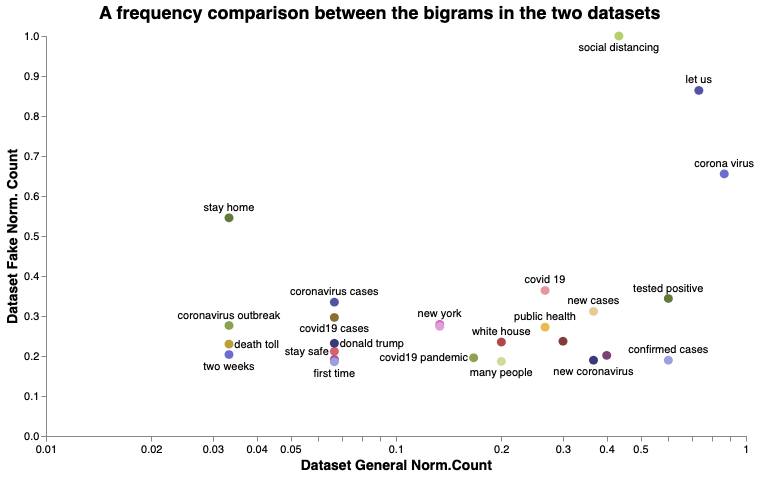

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAEAM0VwAjgzjioAT21Q2CHEmVjx2pnEwB3OKe304zmmUUkBAhtGicfbzc2bVkkTCQIVwhKaRA7WVkwsjQBGTcaWXo0AHYABlKZeH8sNAAWcpkkBkw2CBoALzg0NKRZVNj4tABtUHEgrvQ2BkUAfQGUGWIkABsTCGHQACF-QIRuikUyZaztBCn6NwSYVIBxUzhA5e0AYTZiArRSylKANj--gGA4oyABiSAA1r5Xu8+qhSgBfKRbHZBbpnZowS4QGDaHCKNiYOBQTC3e6PF5vD5w76A2kA4EgMGQikwz6I5EBVHoBhtcRkU7nTFXUniB4rFlUr6-Ol0hlMqGU2EIpEgbacvboUVuKxsfFjd6KHkisVPaGSygAZhldNqoIhCtZ1IAjAAOACcAidPydACY3aULT6fQIXb92aqURq5EgaMtLAg4JkFiA7qLyWalTTrUC7cyM2yVWrdmjEzQkM5lHBdFljenFZ9KD6Lc2W6227bGfaJZnygJSvVA8HQz9ap7veGi1y5DREglfNYYU63bXxfnqdLs-85V211KA6UfbUlxaBLUXRaXWU3T9ihPI90FwUl9oAJIr0319eb+m5h3m8oDkGIa-KOXq+m6d7qg+bC6DC2gwOYODwJIMipia3YNgGbbYa2v4YXCkHFugCFIV4EhdKhZKrp+Uo4XRFp4buhFTuR2jiGEFEplRH6OrR9HYYxNHfKUTrlMOoHen6AZBsxUbsaKOqLsulFptRvHfPxAmdnmNGyQ+yxwEgTgwEZsjrCp6G7hpmm4dpf49geImSf6g7ASOAh6cRpkhPoRgmOImBxu++F8TZzaCepIkuk6EngdJQ4+p5IBhLoRJqBIIRHL0wVWVhYUMXZIVJYkvgmeIfQWXWkX5eFhVMYW95eeV2gQEZdAdA85lcapPH-jVBXyiF3w+i6QHiWOcWJQ1UHoK17FqJ0ighPQ+IMGQMDnDlQl5WFEWSklkJwDg2hGpVal9TVe09havoedNREgDyLVIKlW3VZddXbT6Tlxa541Jboqw6ggZwod1lnbf1V0FhyD3WCDEg6ssFXg1VF35dD65Bk6xTFEebonmeF7FE6xXIMsTzQCsnFoWj10fYN9Ww1OJXPUwyhveju2fbxxVIOzNDOFM4K9FMexnb19MYzz+33VOTDC6LDAIHoupwP4YO0+dUvc4zuly1GuhqxrpxhDOhKKJzmZOpjUq+qU164-jhPnpeSUvcoUBGbiBh2AYsiihAXVa5LmFQzLSpJfAKz0DQDzPallsS0NO02bbwmiaU41gVJg584n2hRIoyNW2HDM7vrzNRgYUCmJguJIDgDyl+u4d65Fjk5y5Y0gXdVfdHYTeKFYywxsELehbrFe8wb3RPAZvQ1snuVt9Psv97N8RqBAahe089hqLoSDEhP1nS+368RjNIAHzQR-EjEJin6nmm20lYSEuIiTaIZxfmM-q8dIzw3iAX+cZnq2GOHyAB5cgGX0nFGJ4AQpg4BgefNekdZ7oDcAwMq2gDAQAYMsNQ0Dl6Q1gfZGGV8HowGqPHRufs65oKnnAzBICGH2DrlYfQzC04RyoQg-Yq1jpOgtLw1+-CCJYJAOcdmhlwTaHsFMcq4j+Jv2kfII64DrBmAeKKFGIcU6AMoeufs8U3KxT9O7UeigEAnAMqQZYwduIp2-FudO5RM7Z2cvFJKARDL11alAZQ1Za7OJ6kYihRVpGYAMHEE4p1UbazLug1hAjGqPRCK1d4pCkmh1blEpm1CpzHFICEHAC9EiqPoh4kSYle5d18dIiphlv4GRJGQ96qSTG0R+LnHu7kvS1CSu0k64SIbqWKIUoSLofgWjdE6X6Aykp+3rlia4nSuZ8Ivmw4pUYypmUUs3TZOttkYMwmYv6DTnIA08E8DwFNql0Vqd9RpVz3JRxgCEGCoSyzLCeThdRICfk0CgH87wcAKbjLpiklhPThIWgPM7U8rsrw3iSl6H45RtCkACrGOIupoXJIKd06JICd6BEJLQKAbF4kSBWACrSOyLmvJ8e80cSUxjpTGJTFoUBwQ4FjDTFxK9pkd1ZUsocvckp+RUAmAK+CiR1yCic2FZy0lSJATXZVlhsQqCbgYkV5DSVFMEegAyQdVa2OOXkyJJrK57O6Eba1w8QVgoZaqklcKyWOsmLoX54pWrmCJfkye6r4XlH9MUKVgznKk2kUGrJfKBVCsZW2IFvqQA7zYPywVBkYgKA1omNNtlmWaszdWHlegVj-M9WGiRZblQgKPhTZwx9wQlpbLUrFRNLwOxvHjY8KzlDIEULqqYiha7PzcX8bcGq9xeOuZK4qW9fDLBzSsENdrvWmoyQQgoddwX7vkHij1trRX2uAZm49h7xRMAYLGTIfIt0Xp3Q6s1IAXDrtILIKwjc6BnsMa+8NPqP38wYDEEyTAaDTpnXOiNnc2UDI5RoqDgtfa6kwC+41b6r0fq5eocURkfDi3PThkDuVLnIYmlY5pbBji1z-UtTttVG3CR7ai-tTsh3SK9ktBuihd4qHibkoD5GG3nPLfhulVad4PFjB0GTLGBqSabZmuTyhjjtBkz7NgUE61n1w-AjJ1g9TlgNIksT6lZluPg0NH4AgBCHmPCi4m8aQEWZCPIIyymM0fu804BgSBhURNyjOm8fmMmyBzS0Ye7MpjrQ6WRrpRndkfo2hAQV8Qnix3EOCJeyWtkSfnUlKIRDf28myAZl+ajJFqY-YEGcvg4CkDHeRXzdXiqCuUFhlqNhXC0NE0alLFH30ZLEAmXL-IGCigAB5N2JMW6rxiU51Kzku-pU0QEzbgPNtKiZ4IMPuIa0L4nauNqjkd-RP9WvmHa8tsV-41veOXdIlrDw7sKR3gfJbhXTnFYQxKzbFi+7qfiIJg7lWCtWaK+d1T79xCpWJOwJ6mRZxVIM6Ix7PYfR9K44OgmKLhkaKa3OH+e3BOwds7UxdsbXsgN20Peusgk5-bVQD1btPLHdy25mlniqXBQC9h1i70iDCC69riNgDza1s69aNvD43MAMFkJYAhv9YDQ+G7DmpnWxcKA14N-kxGaAK0yAoEX8PpEm7N3HHyyiTsTJ188vXIDGDICcHY5YHbqvhbs7u6+XuFEs8tyVjRw8cDS8hbLmH-24dh4Z7NoIZs+SF3gD4Vnsf2fx4Q1zmjPP3Z4ttwobQUCyDyaG6dkbHOA8PTxASNKbboMW4e5e4z18mD8zt7iB4Jk8Ch56Ss3vjcQjvc1truPuvRcM9xYo2QRCsMD9Axk3oC-vmiiX7XqcJliEnF0DNp9VW5f1pz5z+pdPNuld1MjeChliEbOP5acLHY2NZ1xj9YH0Uo53-oFYBwM5N9tpHNahagXZiZ8dicQEi4b9RRExsNq9T9KMygBAL8ecfg-Fj5aEFY3BjgWpI9BN4DndAVXd1N8DesWgPBM8J9MI-dItr4KD45ldFAv5ADFd6Dpgv5FIPhW9Ut0lr5Hxf0MsstANqD5ca9toHZSho0Qcu53NM0Yps0x1IcyDCDJ8Xdp9M0KBNdsDcDvtMhlYqdvx-cxtr4DJdB64ZseRfss8xDECTCHpoDf0vcAMx1WD28HpnDwdLAKAExVDs8p9VMM5z9ucmkQEvdTZcc3C0sMkyAH1xBA4QhHCoi+CHDr9f0a5dRHcYVbCAj50gj1tUDQjM14AGM2BVB44WcyjBVK8nc1DiCND-N8QcBqj+QgwfhkipMMk2iBM4h8QyjOoOj6sMkzdLAysS4eCFcns883kZJpExjf13sqCq8iCmVAjyhEVnNCde00Vbw3tWsKx5FBjOVf49BmhpgQtaj-D1C1ipDSgUCQjBx0CE1V0-0st6NBjhI+xAIY1YokovY3jKYkBzAtdli6jViE9M1xhPZvZAYkAj8bCT9ciEMvjzEXsAZR5+RAY7cjjpFAZgTU8WhYh-4JjxCO5pikNecP1CSgSf4EgksETDNJjojr4npYT4TRCvgbYSCP18hoAMowgWpV0PjPFgj88iiP1vtCQ9AMScTm0MS2JMMH8GSaskTl9r5I83A7Fyw2TZSK15SxAMRdSP02TpTpdx9QSaC4M6CHpJTfBEguULjsjETri8iRSCiHjZiQFqTRiFB6SOTGTST3CWYXiEhEgEAmAVVH8VSXTB8E0FA2hEZHhIzlSVst8owDRxRYAYxzTLiciYy1SbT6MCh7A6BLAsywgjSMlkBLBFlDDNxjCO4UT2UJoMUnQWoGAhd4zKzr4yA3g9F5V64UpdRkBuVuyHolhlApgQgZxCEW8ozUyJCgcecQd34g41hFVR4SF2SLS8z6ibjviZCbleNdR6UuDZAlxhTnsNsC9pESICR4A2hylmgxypwcBmgrVLhFAsjiVnS9zXTENJUVzpFwRdQXBh5XAXyoxXBFEY9-Toy-yI1sZuMtjUU5CJTBVmR69CQKySS7C2C698RsKnBZBvRahtzczfzwTYyQESKYp+QvYrC-DdyqKCyWZ7A+TiAfQcUaBDQmKpRaDuSMl69Z9Fl2jcLVS0zug3ATIsMGFQhstiT5zscUipxN1og1LLyDyXtaMQEwhotdQ8DMM+KAy8KgyoxMsjLBTF4DDxL8zJL0B98KZzBZVmiDsZcEjIKpLo8EirA64bUUzlLOj6C4l647A1A65jKNwjDaktLry+YP5cQ45FADBPL0BBUHgDB4JWhhDYKdz+KrTBLr4hCAMcsODUqs0yjaFfB8hlhx5bKELWKowarghnBIVaAfN6qWL7LP02qywnA8QaAEw6zswGypjRSZjKShKR1fA7F2INNT5cdwt05RFop+xONHY8YkoZs3VwV3g2g-S8qTKJL7CpxqztAvRNLUS4rpEvRtBvpvphrrRRqHIlyrqPlpF7rSgzyLzOr006sEUkUXNtiuM-jFRnwEBhBmA2AnQEAyAmBlIlK29mTCykI45C5YxfDLzyT6dM1mqS8nQd5yqCb64v12qcynSjq7KTqoxSa+rTY5qLZyqd5EqMrHSfzKaGruqExoK+ryq6aTJzBotyb2aor6zrTTq2B5BmCEgdQzNPNyrTN6VPMcVj4wUN8DMfQPFCj3kkolghcOJvBlARDDqsckaWUP9lz-o4zEADtjhIRLymzqMwIko2AmB3gpzC4gSmbyZ7kvbfrS0bjsbL9eN-9lodtyrihcRSMAqzagq68VYIL-au1-qRISYLQdiCdCZdjyUFsj0jpMNLyNjkVgbHYkoMNBNTh7BIRF8k7WMrcQF-RygvqdFqxrVvzQ0OauqJCg6byQEW6eKExf0vZEhjKfhlr3QxSdbrd9BQVvYdESEmFMdxaowTwm7FUFx5M5yY7eC46pwMjWtu8RoXQBByqj6BAC04gvlyrvN6AQh3g4A3BHqZRnqVL0y45tRrAZtYlFLlSBKGiTNlFv69B-BzjIq-767ISZ6vYnADBaAJAn7ZQadxqKSy7yB1BvqEbf6Cr-7+Cwa3QYgrgFZ7AEHaQX7d6oLZsoBVg2hSBQgAoHh77H7a6VN-zXrmzUHjpqYk9yojaSGcxCqHouHTIjbtAN0EzTNCR2g+GfwBHXzTJEBQVpzbBj4DqKLO6-rX8ALP9pVpFNywhoh4YEAZt2ot64KFyyTkGcb0skBtMvyG4f6zHAq9xkDta2jdaiFVIIzmsg5b1cq1H4Ku78Kpx4zfHC5dRIRmNMdzH-wBA3RahihDy4oni3dIVjosK0phSe7xSpqG8H4QnT0-GKaAmNGIGP1iAPGxQvHFU2gT0a7Ead6hjr5xBzAaUFZVp1pIronkbt9DJ3hwFBq7BFt27t0mTX7oIlJvAJBqhVGimumxn0AWh2JEsWo6Bos3BhaO7imA6ISeTwnOptBDpUFmGkH3TJ7PTM0D8Hg7ACgTpypWbrAyB2JOhhmwtsHSmMkiQJAbBLB+YoByrfm2IH7OmnHvgsm85pEtQ76yxLyONwCNrnY-EQrQg9QHHDqtnk6cG69Wgty21+UBhrDHHY7GmHpO88W4gDsYQ4A2ByrI99qaBaHpKHhWlyrRR9jCQ5MXmztjqO5YrUCkp2XCRf1aX2pSBT4x7-qLRQCEm-ieKoAiFyXbmD7qwCW0W5nyHugZslW44h6JBP4ZmRa1XiWpx56uElBPAv4Np9XNnDXipglzXsQCRFFsBMCVX-GbXpF70janhPD7BUW3WnGZUExDhTALAmM2brWQW3TtLe7M0+N5xdWwgTBOWEDuWzK0RE2pSSomaD8aSXoLZxA2B4HjmU6tHLadH2FzC9FC2nBDxT7ahTZjgvDyqfWx0pcGNw2houTNGwXzmP1I923RH-VQUBjfc3nXSi6gb1rs6wcFXrnk2ViSn-ye3Jr1SYxBCbA4SO3gNAzunzL6NzcI9o7CWGmVkVZVhh7yrz2ZahGeGt2uWqagmowb2Wc111ZCRyrYkXpQlFF9bamaWizGMjYKZpcGAjn6nRn1X0BFb9QeKnpE1Lyo0fj880KMlUpIVloCQa0-XZmA2YlMOnKFTbFjb-WiWEd2pA0D0maD0f5-U0pgWiXQXPRvp4XJ3IDii6FmbosMdwOd35m5BWhfAwgqGVdXWcPSPpEhPVh5Bf1UpWtyrnKIAPATJ+VFF-FTHVXcOaKZwN7W3ynlhPGFNMBsODXNPM1vpsU4BphWgFaetZ6nhYS3B6OT2brz6vdjgi2ozwHXTXQYozmEotqyBZttAUDyqUC-AKZ1AFa8HqnI8v4H672U2H202Fm9MBt44Wk5wsbLHg6QEMvv4s3R3qcU7l3ipPBuL5BqXi3NG2HqNdaD1ohfDWpy9Lrmyu4-iTJDgCH-UYwCFr6v2euS9YAHAFaYAHADnAh-UrWRnePIPMl2zmiC6qubjYW+0WOCZ3ZVpmocYlTj2IOjWowWd6X44jYD8P3AhHE-1lGNZyrhBG4jIDdtBezWtxABzT4u2biaukOV1Br5WpTotfDd5r7+sd5QVDakBHFpH3FZGoxP2Lv5APd52wTF3qK+dEBTJ0bctyr8hcttBbu7ANnpvTLd3xmnx8H8f4fQU3vwtxW2MlxHNXHgx+XzvIVycm44uwGx3c9suY2eS4hYAG5wqAoaX4kuFqxaqnO9uAYMaQgNpkrdRm2kAOurhP2srMsSryrirssL7EerjObqbuhvNf1i8JeZu7Ybo1q4WB1agV2SXJbu9seNpnyludmMkHfzgbtTBMnRIXRVureXNQdjSHdS98TyKxPnP2EhcbAzh8Xf15B4hYwTeie+O1BfCFTHPC7AaULLfp38NpcQh7AdtIVyrKXogHX1maXmAGNFU8QDcAp4kylIfZ1l7uhfZ1c6+1AylFEIAfceOk-ZuqZsAmXf0ggJBQ+TPxPcuqWWkYKxAM-NiwDfec+qzdRA1YlTAyAihneUf0t9298dtHhyr98Il68wkEyWCt-Gq54juQh11CaL-cocZREM7i6l-TDsXH4EuF3tmENeXuckogxmwppZQEmHP699U2xPdAObl-R9hfQxQKLhMx9De8nQTmFlp4F-SEhHk9-fXgs2jyPc3g5VJ7gWjmjbwWuTtI8uSiJAGBAolgMIN9gi41EimXnbfgAwmYMIGMSmJetDzRCu0hUuIDaIHEb4RYS2jtJDs7WaT8CS8wjNgNwTAFJcIBN8HhtIN-S9k9MFqAgYWyOAl5+ilKEEiR3D6ZptBImfkBAGDSEgj2GnCfpmiQjkREidAR3lN23Z999uUlOwe7yHK2JdBYfSXhJ0RzDkEkiQSJrIL16PtoI2gShuVUoaPdPA5VaDPyDEpBDAmyXT9HEnyyp5IWb3DxIh0SY6VM0kLAhlEElp9cChv6U3IEFoTmD-GTAs-Kcwmrvx2YivQajEGxKFdoqXAtKvHDEDupCm4-fQRKRzTgpB60LAzNeCK6096g9sNblnX5Y2BdQ+IbUJDXVoJDke1Q6Ntk2vgLDfAboTfksO-4rDryawh6FsJxA18amn-JHrsO6oEZ6UTweAPiHU56DvB5KF4o7247b09uwkX-vnijhTlms9DJgC4A-bEAIAgQTIK0CsqCZPBPQx4TOwhGp43QqILASEPQDwiVYyuRYW8NN5-EQqJwFujyEi6IixqNQlBtImMCgpwQ4CbEJwhiEEgWgZ7DiJeRcYelccIyA2sYF9L4idhGLd5tfBSj7YhWU-AyMKU+5AVJ+ZRfNG7yd6P53u3nbngcKnASjAk5gWwLSOMqm0GmoLZjn7yz5uwPWvpR7msET7gC+OsReMtoAU5E0uK2qAKMmV26Yj9ctca0ZYDfIRkZw8AHXsxWWGUYSuPgqhi1CVGqAN2gPAkfIJMHKjAxoPE4f6NpHxI-mwYvjgkCjHhiaUn7L+HYiDgciMRTgj4W9T-4xJAgqYmcugwK6ci66Lva+KzDsDNc4xpib0U8IVbwwa+yEGhmcN16JD5BDYgwE2KO6CkVczQksSw2YHXwExYYkcqDz0r0sCgQWJxFlyJFWMV8SwfFFUxawHpdEpA0QeQNja6sVGYPNWmPwjYMc7iLoWoFqIX6v8Hon7XcdX0wyicoRdosIogDApWV2WMLC3ov0zorpyWWSNaOXh3iGi5B8Y0MQGNHF7w4wvIoZnQ0yAwgpxf44IUkKMb88LUMEtsZhBiiLJtGgyEZKaLtqQpjO+49UeUBW7P8eMNFd7OumOiASVRa47IRBGtwZB2o1wqXB-CQmejsByQ+RGs3CCGgbRFg3oRkliREIfmFEpMf8yEnAScUzEi4axKBE+wFAiY4CTSwIRySYx4k4viEC9yyBuJDwu8ZmnUkUilJQY-sc31mj6TQeGlasc4PQAqMpx4CFMRADsQOD72sE+QYYESLp5bhWPNyelwFEtiPRkknljmK+HNJvJYTSUZmKNGzcysiokcRJK5FlibSckkIJ-XGKGSS2woq2n3SmA35MscSd0ZRRYmRRaxsbWziBJoG2BMMxGS8mlPLYVoc2A5LDgWgtizV7hXg7Sf5lcAPAmprktLksS0lODSsnk4eMYHsAm55Ie4wnuFIskgAhp+YkhCcE7yJBcp6jPyUkKrBI4O+dpaIeZNK6+Aj4dfEHrGJSmYspwu0+IPtIbhDwRJJk5MfmIgCJwZxqw8FhlMgTtTvAHBJRKd3Mn5EHpvbDJGbDUDih3Bo4jzmFP-GzcZsooU-r6wx72DBBZDSaZ0PBRo54gZgSER3VAL5RcgkiFDkONEnKSwqccAKDFNLEIYJ22onYrrTpKV1hAuoUspkzTpEStiZ418sFLc7qAiZA4y-sRH6yl5sWqAigOtPARfs+RlUi2gFOHSmiW6TLVcQZitAzoX8axKZCGDfHOxkmfONqCz0TgzSfJeU5afIM1nEZfAFAAWEXy2nSIjZlYJ4J3mwDmxo8yYEGU5L45Wzt4GA0eA3HlbC95W2gdoFkCmaXsmggQUvEECYAK1pgBgBVNHHvwiyJqIo4oj-hxD7Ugso5FoWLRLaFSwMuM3eH+hHpRyKSMcj9GBPShPRIWyAWbKgMc4lzvAQI+6fsMemZpMA0kuRBCHZlGSQAm5PUVQzHjNy2hIADuYNTUm9BtZS02KYOPHJlgrxBBcquXV6weA4A4IIkl3KOlRhigOABOg5MS4Oyaxso2uRKRoCzZY4e8U4KWAJSBD7ZyE2bj1x0SZBuUB2HrhUnu7-MeKd8hSIKiYD3xMAsAIkOCFjiz9TZWqZWISisCytfug89FsTM5lpAngyAvpA9V-nyEUCQYL6k0HoA0zOgC87kQRXpYKt-uoKVNLAuNJdh0hnqaURGgSaESICNvVSk4miAzYdEIPZXNymI4tS+pQUsUb4B6lMKJpwkKqe9S1QrNIEuE8aaDPhkDNwEd8kPjS1Hgh8-8ZIxOodMDpbyfp-BT2NXW8D2gP2XYFRhmLgpVDcoR4ZsDXIoWGwuwg1TdkD2JAAK2gjzOIOcSo5WKmCdpWJKP00kcKhFK6PUEcEsBo4EZn4mIbxUSBOIdQiOAemgrilTgBA-IQkLAALbroyAAixwZwqjYGLDF3Qd3N7AjnbDT5+Up7NwpQwM4IMn9FGd0LwnQiP0BSsFDlntAhKR5U4eIJCBCAFt32eCoSq0DaBVMhZxIDgXItCVyQH6EKKJfRj0x9jMlusi5KTNPEg0PW9gTvA4FRFEgYABbf4iVRnAVCXFG8yaZEvmUbocqyy7inbNtHMKwiRkMsqPEGqozBFayjAkLiwLS5dC8QfQistvEHKZ29y+CILQ16C1q0xID+fykP4qNvlCiCpFIyaUd4BsOoHkHKyBVdLqlRi8xa23viGchl+yiaQDGPgIqS85gewAT3iWuKxc7AW7hBJ5Df0NecchOK4DiWOSz5e4MhZMKShnAckESiEGcuxUXLmkNcJBWzNLw0B7an0xJQzxZHMhR4fs-BHir2VosdFrE+gEZAURPcq27Cx5QkqvJ8qNEMYcBG-I14rBdA+o4afQxvHFLWpe6JVN2NBhwByV68yldYkuDBofYMYBaXzV8GchUaNKUDvi1hktznVCrVWpCjFBJzPOnPcBQcjLwYM5+xddauimkQbDzqtQYNZO2z4Yp62n1F8SXRPEYpzO6NYOcnJGotz8gTAZ6MrlHiXAzAeDXxTYwUzew-YxwcYELwzVPUW59Q72RWqcAyrmCr3atc-RObfTkl6AJtS9y4TyAwU0nauUqpATdqByz0GQcMuHmrZPhbXaRH2GxRhBIalYKpeAtYj4zF6UK1bCIMSYrIReCqaDqKt6nIrbyJKyCTOC0U8SSlGSOdV9Quk8rFVTIofMPD7U2JOlE6sBd1WfXDTuUWckBe6z7pk5EUpQJmlvCej5j-u8nX0g8CJLAMUqwKh6K3WayGhyii00BRzO6qGDv1PgXor+tM4fojGu+RQiap-hBty8ZgU1V-0nXdUbawbMjZ7S-I5zAK6U3GvYCN4PpkYTKilVkpDEMNh2MvbKurzvVpyMkmvcUKPFl44aDx96vzsVDoCJz0GeXCTfhP3Dz9XMi-FZJUl8AuBPyim94byofUetAg9aumoMIPWrLzVt5fjVr2o2kaLADG9CbkszTWaQ2lgKwl7yzjKz-eAMWID+2VxYd-mxIayZYEZzeRyqwW8qMtBCotqN13VJ6DWmlwcazVXGvjqYANASBR1wlA9Chr-Wbi1oOIYJE1mXXdV8tI9PQIsSi5BK26TQ9HDpv1XXwMyTwHAKKH-nsRTN8qnFblya2gwx5MUKLrYHxBpiDsb4ODZQpynxhSwXsQVuotSH8hFi5G84ZRu7oKLO1oCW7GGzs1lseFuQlVW21dHraxZx6mOPHJA2FbWJw9SQUHH6HksUN4qpESAGfAgVWQw2qMEFl8AbCbuO2O6lGrvXTqNxH6Q8HdUchUTo2IyT8czlIllEByHPUYTcTGWqbyZx5OWrB0SlFqNaNUeWeO3PBJLVZeGo+VLl-GDr9N-65KlIp0S1xqYWW3DRkmaCK9A5TDaLadokBk6DIMnHir-AeV6qnlH6L1bCszJQlWtHOo9SAlZYdC12mTTUchVPHTDss4CGJXZ0vY5o55ZpAtEsFtIU7JNQm-goNge7y0eVboXGKNHXGiJjikM1tqrWmDksP2g1HCeTk-aZEwgvrULXvMCB26xgputTmrt4lDj3d2gZsAmqe3dBRYqge3Gyvx3+6HKRCQEvNAd1h7QEBkHnUgiCxazmpbWllRHzlaUpfAcJAwLqvOXmb2E3u3bGvIo3vrWJhen3YGEB0x7aAtDFQR7t01SbahZswtjJxjAZKkVQiz4lRkN0rIBO5SbFrFxq2c7mlO8AfT-Dj3coTtt2qoq0DoC+B68tLZPQLva1WCmivemSbinWkKSx860w+QkFAYZCS2WQ6NtjI8KtJQGiiK3XXtN5fSklB0WME8Ca16hJ9SQ2IIoHyCcFv0g+wXRc2CxmjINX5P2vTtu0KcLY0GoyAWxoWL7c9SW2brUq8Dz18QRS6AyMtm77qf4gqCngdIZLELVssOpNUzKappE+9b5PRsDPb1rLQW0UJkSGGW2tJYwuqZgJDX5k57mVeenSbjtd06DRWMe5WrtnNjP6HIGuh6MLuHiB6i982kvbdv5iEI7GWFHNO8Rj2u14+12QhJ2SDhY8iDldECr1paQYDPFNge3ZNsE1LaZUGBhRjSnkBq9GlQBwkR2plT+pMMiie9ETWEA0okAAgN-f8w8PagEAdOt9WhtYnQZiEmVE4QIb477rlauoCgE8xYOcaUDk0qI21GeZ-5pcV+ofZrs8D8Y0crSL-cvrKZI7Za9KCAOxB+Ux6XtxGnij4pj0KMM9WSaxQAbm2tiYD8M+o9BtdBE0XQuPASe9vAR+6bDPYCYSeLh3-9HIWh3IxQfKA5KA+GSY8WvS1BlzycyeK4ViriMLbbtu2JYzpgd44V+jyW+bEZDP64hR4oA-wy3JGj4N5jMerUHQ0XWIqL1tWm0srnNxZINofh8g5SuzGtdftADcMkYMKMwdeK0asmRMoymI7eKAmcQ00fiOcoZMRGVrKYrvV4HQ1BB7oPFgHnDxR4bTY+Y0d8lrGkhmJlfrFksCih3A4TMI7NxJNFxwQ-csYOXjSPf6P0iEpw0hshO4nJDSQ-mCyasDTBuDux2bsgjcC-4F4vJ0493NuFsAS8HgYhsYdnE5dcaJxf4lAdYPNGb9Q63GuE3HmsmdZeJ+QR-CZYg9U8CBukv+wYxja99vXGU3YdxLJ5jgJeSzk0XGNsGudVnJuKrDla2qY9yAD+NmRODUymA5JyacbM1UrRDI9JjvXpuk3W5lglqkIJcwIQp8rtxfVWgbVVou6xpyp+I6qcJ2Zo9T0tBhd61LA2U+Tk0wYcrCRg2BoM-O5Azqb46G9wEsiFIUCfGWl05iaRHvHKqX2p6rB8cRZYMFbWIMU6uOcXZnSJzuxB+eKRGLtlP6O7T+F9NvfcazHrFM+zZsNcOpCoVFIUgB0U4vO6C5n2AygbTN+q9VLBYszbe3ZlDFAAEY932YuAkhwAur+zpDN1fednYHwfQdq8jvZ3HHPoP2M83rApokU5HWq0p4swDAj2TNZsoKAZbEsP726cs8AXUDie1PsnnJD6TNjYrvVTGtqL5qUqsjEQx7Kk9cczk2bh0gmzO2KG82XgDMfjbzz6JobEcS3Qmbq2KSbLBtAvSJWLDiqgbAA-ZrA2jpQec4evDMN7iRICUSL-j7UPj-K7x5o0lEkvhl44ryTBv6TVG6bUJjGhpN91bQrAjuia5E++LFzm6ng+WoajHpMu+BCQCI9i+wiQjlg4gn8AdTHugxfkQgBgOlQxeL0BGpDRedgLvFHy0dkcIp7RX6q9EmGIWvSpS4WuIB7b2GMSW4VWDViKIfLBIRRgrR0vOoWteA6K3eupXJqm9xAP9FCnKpf1DQtgJ8Y6dkvW4g2s9Q2srDA7bn9yAUmdVp2gA8gz+o+WwCZEfIJbPLLcxALZe6uGmUd1llfa7X5jgJBc-WGIZ8wTACgCQCvZpj3lYULVx6I4BZMCb11D5WFMFUbUDuupQFMpOrL+Aeg7PVmULoy5c6RZbMZTjrUtQ2uIqr3QUzdGe-zenoVbiBlYYFai2bJcSR4mJ-7JiedRWOMWazs3YgMdAMjsRL2pgdDK7X9iVdizWZyM1qjhuJhoglKdyTHudFV9Mi0lhcwyYyS43h4JUOqiNdKVR9jGRnbQNNJGkVXMzIkJjhAVY5yXXAKq1y4ZDtWJEyTGhxQNSc+11ssq0wVUdT2WoXhRI+BzahZqFse9XCMe-BhnjOBgp+UI7MmzMZvXeSSL+Bra9Py+2q3r49bOVsEEtbfWQEPwRRAgF9AIAfgK830FZYavdLugrEQvYEGJAm3NC9wTOSOXkyMKU9Tp1DvRnXTv7jBQQFpG7banLBaEXmI6M0CQtDzzrs3eQG+Spua4qwDtLvdut4xVVNVs1G2addebQ7vOCyAQF8aN1zENo4otIgftfxbq0SzF9W8tZ5WiJxb+l63juqkVjBLgkK+29Cu6DfQlrLSBkXcQZ7Y6fjFl1LhniFF45Jho5vDtBpcDRGWWsJp4HrTVqvqZLTFjzMmeWOXdrmjzULcjAeCqrVg5VLFH-vYqa3kT3+Q7bplSjpjrhUO1oa-iwvWnylAGP7mWEeYz6w7UWD+wW0fIrNpZetuGFH0RiAwGAYupm2TJ3WWo25ed1Y-HcmlJhP7Z0k-l2U9OYEOI+fAK3U27vgKCEa+XTPPmRxkH8beR8bDmx+YDUkD+dx+zDsuta3rcVD86u+cfP8Nu2YV9hI-McO3zFuQD1Slw4roYa2Z5VIRxlALSrIotuDj9UdAPijrBVBFuy1Z0CD-MlH5YKed-cDwDyWoMjl69eZ0cKtPyZkBSTBHjIGV1oBAnEBjcKEx6rHFWaYOXhIdCWuzEpex1SycBgo+mCtCcTcMs0+3OzHxgCE1e+NFVfH+8VqG-qrMZnQbk0xXoPX5i9B9Rt3SlOVrV4u3LAPgGmUqe2g3b-wPoaNDjBHPbEUVTiTPULh5AyYAzANFTQw+2y74vbMujyxIa8sv6AkOIEM3EEqcETXxDMi0Kg1MwVZP20zC+7GsmV5YTgh6cKho4egTPu8aOApTg-XvROkogG7FE3DEBTPt8ysNqODjpprsNnT7AoCEE7x5Z9n3QYQBkEe7X8-ZzlYePoCMhTosbm5Z1CrHn0CcwzzjlfM0V0wL73nftoqiSoISxdXhizhB+xm6eQPenCaUDm5fjYgw6AhIOm9E6RuN6WrdJeOB7k3aSOVL3acFzSo4tGRMXXCHI6c-QDEvqmsSUFBPoJ3I3ISTwQICS7kBEgz1iMeGFk5BsIONurSdepkUnmfM7Gi0BG1I9YkCug1rDmRuw9lM88WBpPH9Q-ZTlsY-QcyHp45hB3M1STwpdOn6Bbt09QaZmCLaYF+eVW3cE6UrSbL4eGw7kegbPUKJDXZ9JbhyxaynzZe9WU6J4EaGQNLtekkA+xm50c4fpUinL-rkIxpt+UCqwgPfIV7dur1sKqwH081wPEjtG5D5QcTdgy4kBQIdpCmH8zHrF5ZB2bbcw1xvdjnAdzbEp7PZ4ArcMvnwbAEWLHdQ0tzo4d1lKKsBDaIuOXPgsB629Ea1veXZBYLifRj2OYiB+W1QOeqcd-PpnscMonTX3Wuru5ytSUpZmCsF2e7m8axUmnXdzudza75XLGZwuDzVL1+yY6LNitap86FdELoO7NuWGR3PqyNxyejNAl2bmWOjs23G0G0ThEVBY4QhBjR743s0MFIem-bLiT0DzqUSLeEHp3a7fdGAOumUAKRQRkF+QFu-kWSu5RB3dgEh98BsB2gXzDPI3DrfZaJShkT2ozRj0xw9E9fCy7cP-TOumnDbgJCcATlr3SHHzkFegJrd3YP2nH6IFOak49X6P3cvj72NTwGBR4SeO9yC+afyCxP3rnTA5ec0fsDXzmw+ZkD3hvu1PgaUwYgBQ+sMT3tXBNNp5VgGBSRFp-9yABM8PoCEldPU2MEAf3v2x0XYrVed9UruU454P4BtdXNFSz15SewBWrqmy3zP5assIF5+aBXaZ15-HmWBctWAGXUAfPt3wZcJA+bkNZxb7aNd85QOB2WITEP8DeArdmTDhxWm3H-KVbDni5EIeNal83jrHid6pWaasRwQBbWr+O5VMiRveHmwnNMdwYUxG8sAOD2wFJHoipPLcsQJqrsBEJBXo31Kfp6+5N7JaDcMDxV9m5khYlrPA42O7M2Zeud+x464jCfkSLvYvQJYLogZcBD3gjGDLWf2JXX3MgNcU8zldxd5WQEt-JK+XjUE8ri71vQp6hT8SOs+MlYQt0s94z2AgfiiS1cM7U3SJWIkqk59S5RfFFQniU2hDXHkDEJIn8D6T3x25pbklGZBCqTHoGblSFUSYGJU-GvPbOoZzHyT3V52-jZZNOmdJsQ5OMzft3aQQimlA5V1TqHWPluTz+cDTAT0MQoX14HvS8g0H5n8X5g-Zs6dCPlO6+PvQ+y35Dtt3+-GtqiYgsvQQYN0C3eW1xtgGdn3cb4ravodJmRJBH6JbrmS0aSIm3n+y+x+by0P284TaE6sr+oq7NxDtSGA-H+pXpzBRp1CaRcRnEfpS+wK1WWC0AizK3yabQnWh6jb15n3s+WAELwCbmN9HbnT-ptN3nvTsZbRn8maYDEbOv7VwTDY4foR1ovFVYH7ZOO+9wSJkZ82mr86tnpehpT3pnsDupyAJHyz76QZekb0IcrBZ1n5B9nv70j6PAm1BY3nfov0-wFjX+Qt1+EchCXfASUZUMCMvRbqkuv-ooBupRHiYMFVJ680JqgdDfNkvbtXn-8zwMNMWfzxttet-JmAoIwHghbPgbLr9n6kpgbTM5XmalOjeFPAgnBHCv9CMJ4ESM5qdnTOsl-GH0OA2oOyUVRaADTAX847aAO2wnAHaj8coAluR0QIZQVn7tPvYL28kUfYaUWwT5Nn3QVVKDIAIR8+OJGzZwKJYFWALdOW2xRCQPeVwVzPVgLUB80N+UQtLfOcWvgeA1tipNyvcgP-IG-aHxAQ+7M7V-8a1VOWK8w-ErQEIfqczxPBqmBfF5cV-euF-h4PMgAZdtAvNzHVgfdt3JQ12SulJF5Hcz2QBzAlPwTYPrOjyD9jAzcTxQ7A1y3BkBPBwNQDr0NwNTwFRLHlcF3yGvg31dLT0zP1rPd+TYBaEYQDhoGAQwDcBymYqxo164ZAHTEgrEf0cC8NUMm7EGzQ4nQdrAnmQm1kA+t27kXAdlUcpuKCmEx8HfFuT6ZXZasnl50HO7GJsn3Paz5YE0L5gDkQRdgHKpG6YjQqQ2AZynsDa-Pq0gR+gzwBCAEmNKxK1spTaBj15iQ7Fcp3-QT1fxcYKeyGMzwS7AWCkrcwEh9MLObzzkqdbUEvp2kSnnI96AY4JpRt9PQI30vMe+Rj1YgBSHmc63HJwchxA+HQykv6J0WOMFeILmDAgNGPV+D2zRwBpZOoRGGOB7JS9lOV64c4H0oyAtIM8CP0aEMLZ+MTOCJp51cqCRCGXRgHLxvAMqGpM07H7RP1XyG9AVQThFcS1MUA9tVv1WVQtFqZvAbEArx0zPn27ksMW4ROAV5GlhedIAmh3lcKAqMBXlaUZGWm84QluS5QjIaIHZCsbF50YAsDUQNXc0gaUJklThKtXM9EBA2znB4vdUIalhZRE3odL7YClMAMVVRXEBtMFrXUVjQqfyFgvye-229H-DvCJtzqUaEP5jYR5n2Z3Vawxj8d1QXl6wlff2F08EMb3xdBjibUDX44gSHX+YHAXwFcdHRNK3oF+QdbD+DzPeMLuogwU+iDBtAOpCdBuPaXRc1xAPvBwB5fSwQ-QZsPMKdFRuTLlmDMiPrGJ0CBJFndxDOAsM90HoVNVZlHHG0OD87iKDyXRaVe-XQY61UtVZ9hQ7uVk91pI52mBtWEX3B9fA68w7JT+MoKnMyoKsST8o+A138tnUYfwf9R-JwOrBamP5FLIR4JoGBdBw9nyoYzYA+VdoLvCpxEd-TBhgqddMac2vMWgCGwet9-EtlysJdUGjgh09Ntzr9O9AkL+JziHa1DMGwy9SHFlgUbXJx+DPgLlNGTXpjtJAPPFFCR-mWqnf4UQy0ypCxLCzmwcjuDynI9b2GWhFhlgZWzgcqg7uQIiiIwUjKJjHddD5ADsVzXQdu+Qhw7JBgxfxbl68IhxLw7ySC0qCP-XkJSVEINgC4iITP5GF4IRcUAEjzAUjREdZsCSK8B5AX5HJCig9n2QBDuZQXB5vwykLVNdmYuGH4qFWCxdRAleHgHCNw9IOE0rsA7BAMoNLc1lCU4KryjAzgSlBsZuKejFbdQtFGTGA4mPAnkQ9Aohx0xEwRPWixQtefBY1xQ1wD7NzPOaCtd7nbTiFDKhEK3IRFqDSxHsBA-MTBQ+SFqFgBC2e3x4iHbc1Hf5nKECw9DpEfKOHhfQC0W0BJIGACMD4QviX8BogeuUBFtAF0Ci5BmaIGQEiac+g7l8QBWhsRogFQHqiY9X0EBDrhYEKWgGJfqPM9AYaXFuYjuUaL11SgfMKQjkFXLT-0NMC32qN-PSwEd5YQ4yJ-CQ-K32I9JyHkAmsDIUsA39-Henw7wTow-ECVlDa0M39NwosLywWvdAKYBhADJjMsDwnL3XRrHczwQhaAGGxpRkgvEMetj+Mol+4tve6NBclzapz1DcuMGNIN3HQ6yh83gnLRvxrACoKxN3Q6yK5psyZQ1JUjOJmhegyVKrWRllvbGMW1nfRRQegkZe5x2kA7aXCgipXTR0nQ2nX0io4guWamaBmIikNm9o5JjQ-RJrWa2CQbGYCKPcRLfgIcI7BAUkRQYrAzxAREUemi5iZAttWK56ZCF1PAUTSARmoUvJmku06XBQCBdTcesL9DVsZ+3JQi0YfjU4wwmx1cAOCV6UNtFgjwJbllcB2Me4QqGsICRcQSvhODEbPaIljXyb2JpQqTTEPNgaZA+TCAykTACxcjw3iPQBFkNehbDHYoYO7l7vNKH6ZlGE+H+D6gJzFGMLKOpQ9xr6GGxLwh4R8j1YRo0uK4RAZFjx2ixvPWMBZSTXm1HpI2ZTVtcJA3IVcBg4n9n6d3A5OPZ9+2YdnlQu+VqAXwe4liO7lBqEzSlJVpd6Nc9aHf8hrsuw3Rg4hywRO1kc64TAKicTI6+FXjBMAX1MBTPUWPSM4YDrh-F4AaCgu84CDskz8a47uQvizIK+NuY1wmbCYDzPGbCfiHSHzQZd+42uEHjKRIv0Ki0A2fV-RljZWIHNX8dS3s1PQF2jZ5BZaLGQ1F7CfQFDhHK416UkiMVyh5wE4c1bjNYkAEcJRGK0OIj-wZ4IuQF4unBdoCEwFla82wreOENelT5gLY7EGUJjil2eQI+YdEAwxpQ-YReDIAuQpkL7jhpTIB4SdtXeA3i+E2OLSAiyERIf0H6DXjf89w76IjdyYqfSHYuhBuEXCY-ZF32iMkObChDkpABIMEb8N6KWgTVG7k6giNF9y6EmaXOnFAygQS2oTqo6+FsScQcAxmjwnQ+IVVbIgeAA5SodoMxDfEvrHY07o86NtDqY1iDaB8NZGSpYjo9xLIceRL+DUB6FUALB4r5CGOCSHo+cRVVxrXwFIBaEKhm5jFI8RJyTQUC1E5UxnM6KwDu5DLXkAbojiHs8lEl-RjtTiZYDF5aqddX0SudEjRU85oFwhiS2PG0ip9W2URyTix49nwjITAEmM9gFIojz4lmeHx1MtfY8WOgjXfWawUTR4nmIlcrTV70LZptP0RHEYxMuXz4DISnA1pakRkT84kowRiOT64EvmBDtrBQEVMqo52MawnAUUAKj6k+QVeTh4MoW4ilg8RO+TaUCgFbDIYhxMEZiAJQWptE9Wm0Zj0PboBptnAmNx0sCYm2MRSyyeAFKMFk0hN+J8XDTALQ1OQuLU4sqA+0ITfknKNwSZKVqC+djGVrH2pekgJ0WSmY2hMc4ohVSEe9zPDIGQAfNfzUCQKXTOPCieU+uAMgKALKJJS5QwVKIwWfE2If5GbaezPBy-T53n0jaKeLMM7EaCzl1qjZVPYBZdA+Xy0LYVJIqTjw-EHiRywCAE-1TQ681NSx5A8Ipcfkp2O7krUkRnLwiOZpgIEOpI5TbZTIE03R4oAToB4szLH1Msdo7F0SYSb48BNYTFfQNKr5GAPkD-d2k4TRmwDgH5mWBjnIYXM8VgZNPLA1OMmOYS5QloDHD4A-dSHIoARkJIj2fDIjsZeQLNJDTUPTZMzRO8YDhJoBIloNzETA+aA6g4sUeDv5zPfEEGxBYPEj7JiU21PZ8+0-YnR9aEQuIjtBYACzQjNIoSg01AWOTmnTszfDEWIDmTwHqt3kyrzDT4NcCwVhsAQUQ+jh4QH1pSLo23j3TfAEQ1QF9iYU3UjXw3PwMtdKMETctsyBlw2USjcUEZxjjauPsSGPa+0SA7WJth5VD-PYNDBj-FmEoFWbVtng50EpvhLZXgsiypIJ0HZT-SqBGNI3TVvHyO-Vu1eoPM8sMpoOfDY0uJJEZWXeL2B5DfPzWvMJ0RjGsBkPRdJpd85MEXNEY9BThWihRN0CbA7XZ2DlTt46Oypsjg1wB9isGNz26o+MzOVTjYVSVNYkxM2LCsBRuFz0Ey54uUKG4ZwU4DVoWgbEAkzbtBAFUzWgHECG1zPWHyNwNM-8GKA-gRKIc0JSLgP3hxzR5O7kvYMqzA0a0IzL1ka0bRwSAgUtJJoTXyFpVNx80KgTKozLAO279DKCeV2C+Y6qXQpLKLMhoiGXWBhY0TgdRwOTRGZoHaROnSQmkJj9b-GWBjoZ1HVg97HN2dDwgRDND0OAorN6w9qdqHKTN4kFKnBysnFjx4OqfTNo4dA+bjIJHdNnhK0p04LznSGlA9w8Qc-CW1bsiok4kmjgBG1N7jxEnGD6Q5zK+ixtOtKZjst4TdRLQyYnRbLn05ss1OC91sseQz9QEp81gzdQxvzrkrdds3YAbMzRjfD70zNAWROjevE7wIyY9JCTqvIThXFGMfKOvjv05kNwFZte7AxTOwshJJwHvRC0VR3LRe1msJ4o+Tb9yPZogpFmg8jyoUC0CAzqTs08BRbRv4evDF4b09nwYQa4MsClJalNZIKTSUjAOMsyoUUGnENaCD2PDouaskyYjwMzKgTpEGbBr5a4WpgOxGtSzi60xskZLocYYw7L7YtslP1DpkY+DIyRfQY+mxR+6NulC4VnblwPp8k6ZPDSdObvHTpygcqhVyvqHbM5tpdG+WaAkxcjLZTzYITnrgpsF9KNxR8ebFaAMLcz0ZxLczKgaU74Welp8q0vTzCzNtXPkPhHc9Bn-RoUl3yHFBUbRymSFfamKrAmgYhEPlkFIxyr0NBfNHt1ArTHPESLxHES3FeUgjOAc6+B+AYQYhMHyMhzAo5MfTY3Q8Ody5QvEE0VGMAVjV9f8YQO2iKaQ90XMQwY8Ql1hja3ESD7dGTPYDU86r3XRwyMeRaBy8CewCySrK1Ujw9WYSJj1c0hwDB0DTL9OBSnkg42ed5PaXGn8FjAtiI5G2B7PSSmmYchRToZHYw7yowI4DGsbhOOU99x2QMFMz0JMC1bQX3OZR9yqYqcEhod4UnSk5IcIUiuMdMXoBfZ1DOHIeB64VIQ0knguKNu0-88BDRxYs+jTKNC1CrUHpKEhlxzsKUK1WJyRHFRIGEj5W-OW0TNQ7HKgCAvfMdtkC8UAfNwojKPox6lGTHyAaMhZLNiczXwRv8HgSxICyQYWgvBQsSRLBiyFAZWF8ApM6+lZ0H4ZgqwBdsth0asS7HIWXS95RRDWhCVS-2jx-ALt03YUZeXMjZ44n3mVdQMp9hs1u8KeSx4DZGTjWgRWePNJT7ABAE2jQnDXjd94sfvKl9CKW4SSsxg-5lgJpyeoXKFpKGKI+z2fUoQaFfDDaBujEDEjIChvCmIAbEjlBl1kAAi5pljM7mN-UrsICqWjwShktNyHhbwytFpiT0O4yLyUcg2kpFDoYVMHTxEtSkN89CrnkpjltO30MC0C+KmH47C2wrGCz-KQps18i8BT1MIuWos1NUsgkOEKPmfzySoSimPRFgXbWhD6xpgMJGA0v2CFA5ZB7e4nOTvhKwyIxZAOAs-YnclwurT0I0awFYAFe8hEDkcy4T4Ad9cvNozQ-UXOxRnrF+I0ToY7BJFyhxMpwz0PeYZPWTxEsmgsInos0lgK3Uk3JtcY1ZWX5YzcqrXdMPTA3NasfGX9CoSZ87uVw8FIZSzFVACpIXwZYiclnJgucm4tJToSswRWBywD3HXzPM6uENUf0Q2gCRo41IqK1ouHYtnieQ10iHN1Y2VJZtSkIfjUDiEBlyjD64ey0PR3M-VMWKZ0ocXHNv1awTUyaWS1jBFP6CHBMEnMzdMKKkoNpicBxxJAFu4f0O1STBJSg7AQgpaOTOWyEcEAR81sM44vpSYUyyVhUh4y7SMNLAykE00kAeJ2Sos840uHhzOMErxKJVAqwCEUihYrECDstuIOju8N6JcS6i7qldL4iNGn9kVHYeEhpIad7UhoAdUqP+DU6DchyNeXOdMk4ROEOPKhBYFnCCA4SwnLlCEyjlLF5eEktPET0yzlVegCLO+F8B8scqnywL9NoAfk2gA5hgxuiwWHj5SyqvSRZSQv9ixtiQ+uDALD8Uov1wDga6NT871TFJbJjyOCDXVCZE-IjQ3XA3USZIXFJl-SjPIURuhj6AbOW1voaNHwD3S1iSbhtrL9lLU9SnAvQB70UwDBEBuVURblLPVnRKF6GZtTaSlSnwXzZR1EAniFtynoDsQBeAmXXD7S4vN3VvQmkIvKNi1iR589w5PAUjiE8+XskWoEyHeyRaQCrtgsEt4pwSRiYHL7JrtCEt1NEcPkQhR-45dwUzwFFYEdTjNcbVET1IHAy5pcKp4HR8tivVKsgCKyTK9V+ZIsS-K1GCitu00DLCu9skzfWgUgpw8zwVE+BcsOC8urXwHwsVA6GRmCOK-wJbLaogdPGzSUpuHjgDARhkFKnfGtMeja4QTGzIaOX5EU84csQFuYlK5Qw0NysGfmcKgS8BLpzIEwkKfZ4cpO3bLcuQOJV9I5CnKWp-qPJ0QFG8opzow6WWhnwdiEYctNjgM8LOldzyfBg2MMy7KLlDAq18CLK10sJl5sCcw1k+MPXNopCdZrOH0UTvy8VB8q3c8hwW4K6RrlTdeXReFTxEgeEyyKJKuUIKr0II+G5UlwuWmPgVaVipXKGK6Lm1QjuM7JZKl0jJA7TuUhE0IDJ0I6G-U9KXbBu4jIRPUsAmwOSr3BWimiXJQOuY6B1ScFOyUsqfPITHzSbAXQxwkdDdpGt00cI7HPs7gmcC2r+MUjUCg6qpIQOr80GatSigqnsAgqRSma1Kh2KMCo8zqsxBFH56EYDg8Bmq-Qteq2cxrELzXyldS+wHcCELn1NyAyoerWI-EFnwnXeaoQz55VTxTT1SzxKg5AGJdTGNRqrhTSrzMqsi7B56bMlxLGBRCr444-B8lCpJyHrAAKhMiQjgzrrCtD0oRigCvxrYDPURnB6MI4vQriSwHHRqVC7oFm0f1VGr9ilk4KmPhmsW7F5rS2fbRnxlfbGpTzWav-ypyoC86gTD7y0SEoTLyAMKDDZXU+Flk3EdHXhQboGKHWtmzLjMZSmhOEj-t5CwsOGI9MAHwPhZCpMoVy4Ya2tI0U-HSxjDBYMpzCj7yt2pXjWgNkXqFnxO4O9qTAX2pLwPcRTGwLLyh11DqS8UUEwUouLvMrNFUF1n4LxXP5MMgP5EIElY1ctUOzkY9QwDBU9E8OtRiASwlE94Kw4xOIpScH6sMrxE9PTDlqBRRAXFMTfdIWTKa7zzAwG6rJLoZ58+YqrqWE4UvCsDsQ5nWKrS27XzKOUiyIaMlPcIFR8kU8KP6xV1TIMqyxE0lJvNjcmYTl5AS0Gt5jc5fmKp1Eg4LgVqC6j9D7BSPD+Wrye6kqteNJmJZhqBQs7et8r6CKZmWZLgd+XurmSySubLykagOF4vQs+1fqqsluTezf64XKprGTR1isl9c+8vAaCOcQCYBg036qK1YPE8mG859d8qLLpBYBnUzqjCDB-dwQ3Yq0Tr4Pu1Sh2YIavl08WR4orL-ipmhMhIQJwBuSovHKUHZbaoPNfJiAG0tXRxAY4Heq5Qq0SSDoo8qA7JA882vVJJEuzlLxQzIevgaJCcaqvw9KilBjBEsEurZTIUSOwF4-YaI2EBQcxyLiAmGoRv6SxgFWETjMQ1JlEYM8VLIuyEWN7ELVzdbEO+yRvFKqexeysQXFq2sBSByloq5uIRqQAHLJNh+uHik6dPG3xv4xAZIxuvsXKXGvPrwFMJq4Rj4Uz0KC7a4MlfNAgaEoxVri5MvAUhaHTBQyOILhvAVKbF-KqNH8H8KbAfgCegmoLk+WBSEcRYIvi9qm7lwYLyoafM3rjw9dF-x74I6ochzG4iRK8qM-tLzc3uGKoPBZyq6yt59fXprosDYplwgbD6hn0eYHc6BnrhDGSm3MB5pOJuYaowRZvmhlmucHQEbpW-zIql6uUPtDe5WamLTgqvBzR4BSKhjecEOKQkN0-QUyv0g3nArzQr7Gl6g5r+We-XOoBAOxIibuqZAV-wYsV2iCS36w5vMVHxPo3ky2a3A0dKUYv7VGN58dpouROm9bkzt7AbEMMZCxDKF1jOGqGSE4prIn0LVZrKpNWbdGqcGWNxQSv2VDIWmWvESSiaaoGVu8g41jqKzPqhv4JxReszLSUxqtoYXAUUGrAXy35tYlvFBrXxB1QVLM8aV6k4G9IVapJR99Z7GkjXKB7PBv9imqYbMFqhRJyt+83MGVB8YCmQXwl8fGVLMcbxwZpGsr4VRtjtLBW27SHhnncZ11b-pIqu5zSU-JgdbIq5KuHrsld5ueIgSE4A2h5k44puhGecQWDRRGmmLcjTmy6vpqpQXnPeKqrEtSGtctKLmWjwk8GKZL-6lOLvhE4Lt0TsDXdxtJaaaOABMhaGQ5nCqjoPrDoLfYzxtHgaFNpzXq5hS9gWawUtP2ixYAko0yhBGxsKnAN+UID614Kvml7asSz9hSThosfM6Dr-GF1VwvK0Kz7qz3QejLJlq65vI8IcNMUtTbAf5jKtYSigAFL0HDEgTFYa1e0db4SuUMGED2o42Iwv44416wgOQOzzbO28yngiPcmlB3hexM2qU1PGwagDlN2hMQV5d2kwToY6FLmNGr3YaHO1ZqmQ3CA79cWcBZjzqTtMVrmaENgnQ4SW9pAjpnKxqSacRKBDVSk-TDoPkBWJOowSE8vvxg6O2lDpKRKZM4HCamm8RIo6iXShgqyI27ItJTI7WLFEboAZ8sgi4cs4GZptK7MnS8qO-8mkaQ6JXR10pReJrMrNK+ekTZkOh4xKRQzfBFRDm6JGstb+O9mtdyMa8sSLJX9PcOtTD20WhpaHSmNthaPmBgMTlqPMUCbhmgVKwGjU1QcoFaVOtIqWh64Ad3M8OopTtfbSO57T3q42EWuRaJy2Nk4QR4U8Khq90UyBsAIEJVqJL9O0VLRadpF227r7O7qgH9ajcLrLxCYyBDmkywWArNgcUuJCHYpcmPTKAm6L6jw7F7O+EURaApdpI8HgUDi3Lpm-gi9VfajlWvb4tDlrObuqQ8C2iIU7VQXpyqOFIXpd9GQ3c6xY41oeb0AMtOuiBXYq1-1VpIyg14OOAVNIkSMkGCWbD5BSzPrNmCCtiq7miauvQgWiujei4uVJrE6znUwHtICvH-MP4bpArwYKnUqt1c52pdbpBbwFP2ElpwveZ2C6CGqKFxA+wC0HaAcAaSJdAjutZq5r9iZnPZU02g5ue62VSzsRh1kTQuxBMCyPN9jA2zmqahDkMNsrTJG27Qx67SPWJDlkqLhHjNJk5BObqYWs4o8IaSV0B+aEu1iQkFmaNkRB4IezltU6769KqHFFAaDE-ZW2PtWZcge-Nt3M5sCpFnoqmNoEhtMeq1qSEsMYQBVhaBc2F7drxfjFqySWu9tRNbOBHoGp-W5bLBcBsrprw1sui2EtDFS15pQlzeecpFKaZEIGpl5lIEM+lfQeZH1qrrHBPv0fKeLFy0SOmTph4SPT9jRLHqg3ldFSJOUp65JgqcRHg1inwu3DTWL3ERbZuVumZoZDd4FSCPWkMR5NuxJwqbr7ytPrXR8ymVoZ45W3LmONycIkEA7HnA43bJFABPrwq2uoVpT6GAuhmE5LDYvgqZAgKpmKiINcPwhaterpx16UWyfn29OCfoj56Ve0l2YyZcbNjywvAehO+ZdY1RI2a5e+gqMYGaLK37JaKrHpacEeJPLjKqXAizYBvYAhDlZo+yaVgZ5Wc0tqBIarOKdcCGegz656Dcq0o6nu7qjUBOQNXDQYmeqvtu1YGL3Mj4vyAnKurwrbUCrj4u+-sXIvW3Sl8EiOb9WPpyqY+kDlMY3gOgyhBdnwJNKUIHKQc-7I3qT6+OJAexNFjWakaagB27VHAYBwkzgHzPLAaJMwOzvz-rIeh-pRBNo4-Jj10lANKg7fU37L-DIOw3H-aEk4voWTBO0AYA6pSeZyC8PaosjGBuKQEx4MCjJQKOF2AQVB0ah+kAFu5lug5iuA7EcSqdaWe+nPa5TAfmAhQ2A9Prq7zxQvV4E3OLLqhQ3WiRol75BKvLDpmCF9I4IoWZyKpaDBqcBFh6AILHMHHu9NvZ9rBgtAR4Pu4PIR4mk3TuO7w9VtDsAlRFfssG+OVqBsRu8IOHXTje-vkywQK6vx4Y5Bjzu6BKRIVDSHTYbEGUdPTV0QDkoM4LyBJR1aN0H6Mh2aAYBkC6Jt0io8rKk17wS8msihjxFXJlSjxb4TBzxARdWV7KhkAFr0YCqdqEhOvZV3WC-+6cmBFgsYIeB70AGcECAWeeQEcQyiBlya1P2LTEG5hrYQbjrLUvLtJt7ypGWUB70b9UcIyCg-r+JjgaauaBzvbnR30-rJwcSHJpBL3x5VYTDiWyHhgGELZ4gbEMtLV++QXwZZqYEN0QxjPQOVFLAGwQIEGAXVFhzwop9ycMxAVYEhzSBx1joNgWrwfESURiPBcisbLt2raOmftsnjrdbECuGkzYiiRCuUkProbzPEvh7wkcjAdW9QRoWFmxuYzWnndvYGEKCKMQ4VUSxflHighT2RV-pFS9hVkoeh10AeQWJQRvSOZo75cXpp7qoMns2s4yQ6JNSGDMgB-EtybNlVH2RVPDxFWuwUeEy6Ja-xNY95COmvVzbeTGgZxWrdNUpqrC0e14ivGdtR4EnNnhlH8BpIWxscFKm2fb7huio0jWq6+GkpZ9QW0rqO6FkYVdJWS8A21RwPzp34rCRUPw6YMzRiP1ryUbo59TRZDIgyfevrJGH1Y1HqzRwMrwi6KFkzxvdGwUT0bRE7O10fkE+8-43SGxYpMdQIUx7ECMKPABdI4DDQQTk-tfQhoMajmWxluYddbRWv+0fQ3oY96W+T5lawDsWJmc77yqceVr-gtskkttmwuLJ0FpHEKXd3hvDi15qwWIjM97yw8H+1bO1gp04DsTOE9AFOz0HVqY9a3k6NNcqvT6p64WXhJMQ4iwn8bsx6e1zGnoMIDQxkZCsbRHSU-iVe120IYqkUdLRPt+GLrQzvJ7KFbsWlanvbvujHhifLwwd3sO-r-G5Q5CdIBR1DP161M9Zph2DU0vCZpJa4AyCDqFaBrsuLjgXMqLGrRxBHzLfKEid0ck-ciYMcZKMrVmDWJq9Phd9BjceBRTGyukzGt6zQd1FbTWhniAvcdRXCIxgefEyZWeiSBhN58GIAQB3W8CYTslJiEwEmNkpYr7YD4SwAXgpaYBtbq2q8RuJtIUJYCZpTJ8sHBAtnNQaPbwFKydHQKy5WxybuqfLCcnA5SdoUdVcGIEBabJtJunaFK7RMVIcUMUGCQGALu2cH0yEKcNB2gFGuvMyRdsjV4wUKcgrycQImxHGj406g0VdcvAGU7KxnHy0c3AdxSx53FHEPM7cptCfAV8PdKi5tysW5On55iDVx+9TiuJiZ4MQYGDOHNx8UA+s1ulaxTpSFO9MGyMI9MLaiY9BmwQCqBeIHuz5ewTEB7elYcPSmCbcNILdpso1r+ysUrZKxLwRzXwPE-gYuw9cEJ7jJXGDsZIKeLLUM1hhtdRxjoKKAp3BjBMnoNQHIL7y1qBxCpVEJvvwDfawdRrRKLzydgWbSJTwCLm8nPCjQOJ+WNzvXdRSC5ZC2zXI8bNFzUqxirSrFFceBoJ3AgZUdhMYSL9JHqenLLYy39hfGVgoZ6FmiQAj6CmcrRJnXWgAf2bmeyJq9Nl7OGoinugd4BXjTAGhVxyqZt-pacPrFGR0wwUMCl9IEgBICzD6pVHI6ngUG-EpHqW2QOq4QBnSR0skpz8foZvRlSfhka+BJ1KsJ0SeX-lpgI4wjLHnICyVYNJ8ROylQzeLK1nPB6gdYk7seNI0xP6qYH-zjHFXHARy7NstHaoLddG1nSxjqCMjlZmVgWhTu4jXqFjfJduUBa+4Vq4LvscNuehW0w83Zm9RoVu2dFMb9TabflRjCBjKnTFH0VtaWlRS8XjOOGRg9A-huayTFH8TPM77WhvkYSR6pKYAled3sXMNS33JJYa55cq-iiAnmTAmoh2bjOAM8CCXpmeJuuU3No00Qcpba5hVRbqcE6vROAjGE1L7krEyZqeB8sEediSHoBeatcaACny7TEy-UGTxMCt-3VVup72Fu4UmtQAGqj5wWDWhF4CEIth6pMwkXmJjNacClTbN0ErEUGu5kYT8QlGZ3VX5iMUkUFYGt15rFCrrxPBcxt1HnAa0BaeEteBqwXkYMZmvkYQA4SX2OL+svX3Fk4FnyhAWCBddDrSBQeaBplLp4qvAUutFjvyrpy5Vv5r4pOTBVgQJcBb6TjWMBaFZ-YSl2L5h2KmV9Jg0BXjeid4K1V79YOhmb9QA0MALGAeKER0EXRDftj0xDZ-8cNAzgykFTx0ch3DjABqFGRaRnJ1cvxATuLAsQh4PMFGUXTYCqvvK7ETCixHIuqWbWILwRFGHsZWSdGAUh6E5RObuoseBOABAAa1FnM0Jxd4r8EHfpmLG4CDoZwycInspcSeyWZVjNJ4Ub3pfSYnrEcVmlRdu0LQGeQUQZK9+l5dGGO8IQXeFiqioXf0WJc8BlJjucmksl2eWC5nFyeU8XkANJmmAyCRMD468p2bjfJFACpf-zK6R6bSXpKDpzkpIWb+QOTv5Dxd6BSl5cZsQS8JqJj1OjS42MXgl8ROuNhWTfXgG4ZUFmMrIxhnLhi3K0BezrH8UMYVlkBdLKXQDp+2pK1lA9UsoKP0URDNtJa8IPTzfxi2du1FkBKYWxauvuZccLEvAOkD+mhQqoM-OGg1bIrUINidD9IyZeCDgvGfVuH3y1LLOSymz0OfKQgPZbSXnwAcbSWzqEMtYGP5m6i4oO+k2gGbRa09z5x-AEqlx4J0HlDn7zPaMuuifs9Ut86Pw6SvPdzl6me6ogjfeFeqkIwO2XKDJnBIFYTgBqdvqhJp6RWrwEMFNWA6+IQbSWqkqVq1GGO-Bf8mtJkzFDkdUW5iyTeXWuBgnhViEOMADKQjVSz6x7nBTGB+wUmUAEhukfhkKXY6B9oGXDqMJV+sc2apXTtOuHJBj4fzT9EKFpmiM8QK0KTSWF4budr1LRh0ZgjKZYsX0Wa0b5DZ5D+VVWtczLW-hvko47Knisf2gJT8odAjQO6xsBkwTtXplmKhRn4q8hbMExGvKpFX1BghYlKDKAuUCW0l642n1BMJZoIFuxcrKCNIvaiY9XtEoW0lMMsFxZ5IG1t1uF4v5mlCkGRaseY-CZXJmbpkn+MkpwT4+ojUvkBG6hfq8oKVbVQjzPTOCNCTQ1lrNC510vvkhG17RINpkZRde9ncluSzLAXAdll0wvGPYYFX8QA9eR07Fx6wWa9-dUsgWLMg+FQrUusfKkLU8XsmA0yibR3L7eNKLjMwcyg-s0SVW6CGcDxk5WEMLirEGBoF2gBAGrB2gcwGWBgwSUfrhkEUDn8GWYfLApgygoeFOyTCrKXjIC1u5YAZxAXFAOx4eDKDmKcN3VeHQZFmfv-RssJ4uGr+K-ZZlmGsO-HARo3WWPm9h1bsRegkN9Zrc6ZeUyG4myNqF3fXa+2oyZXu1-yu0A3QSTfPAuN7oEk3dfC0Ak3JNy92rWbpw4SU2zbOTZAIZN5EUk2QCRTY9A4BUhYZSpwOTYEBI6OTYcxtNkAAs3z6OTejQrNuza4o7N6cc7765u-KjBnN-iYBEKwvSriR1h0TYTRovdXo1so85vGYI7eeyUTTdrOHPAiDScLREc2eHEJylnl-noWZRuOTuGk9aWsYymowc4AjnropaLmgsZgVeCllAbkfZXIEkZGerh4Xsmk6ct-YGkFU8UlhyXZRvqAJhfOUFcmUVOMrZvqVN8Vf4IwFtiBMBwp3DaaZhtgtELi20JNJ36s86bfLBplScizzkqdgAm27gu0mRKPcYXEp9R4TbZRLegYAQV4VIwuEhRWXLHhO3uZOwPaB5AOtKIYWWYbeu200nftUV+Nn2ZiRqYbiiWADY7LcWnR5T7cyxjUzaXM9qZAAxa1PcfXtRHhhn9PV8P0yWiG76tncvy9KRJuB8XM0aiOMEufAUaunwFP9O-VDN8z0jpZAQwEMAYwQwF1jdANSVztS5g3obKIqeTGSmmyz8sJk6dp6HdoEYhlyWUy1ELZwz+0ntQVQ5Z3uYE32EBjDHkxQXD37VGAULUM1+hWQBf9czclumHUt5KDPL5d+CGqA5u9aBv9MWtMCs2v-Lkb4LnUSeR-9nUH+BdM6Db7aXmema+wjI8+FHb7Z8QdiJxC+msfM+LYCRywIm1iw9KRqJFiNDU6xwJKHqA16RZnO9z5jE0hCGXOYMrRolp7C7XvWv7iZcG+6cP9MCgDqEDlg2P2WDY3YlBDMaBp3XqixwdA1B-h0Z8qYuWkhKeROANy2xBPs+leZSw77y19NY78xksg6dL0+OFv5b5ulIOW+JOZTfSRWmCHbzYVu7Haor5FJsvpHuAgWeh251rfkEjoA9BgXOfZHDwXs17qkjwDKZn3VHPTFfjACXRaisx3RV1iSQVZePcJ0R-EL-ImjwLYfN8YuClRIXxrun9cGbXQYZrz9Sud9cYxRET9Ye9bmKWinkx1k9KnA4zb-YGcSB+8uuN7glddwYPg-IMV1y+bfrIb1mHbWhm+t0JagosIxxEsAUN5nSLL79HL16BHUrPNkBHUl4cwA60hXfkGjYAkGIOsqZW293sdsgnGdrgtzSUKcx--mPrFWl7dyXf1shZYhXG5PblZ3ZmLJ4OpvJ6H7S4kFgfvKadhVGQBYiRykrLEDv0YIpGd3-IND7Lc3bvnO96+BoaMVZ1hv95GM1Y5n5BfiX5QjnIm249oNZSPt1Dt1vNHRq6ZtsvHEbURAWQzMw2qnB7deQCGk8chVYfD-ADlJB4eElQ-HWNWcIqaly20fNnqZ+iIMLRd9pfYpjVNrzPTERevHqM3NS9JfBQmahGIgd2h4mELxFOB4ERhR0UQ9hXKB86jo3XNtVeQ4MUBTagBD10bbhgWqMTxyMo9mTy9Vtm-UWLJaR17eHUH0e4MYx5pho6FKYjuSCFtfW-Ft9j4mdOnmWvQcjYd2QPIxfvKhpNfPNsdV9o7rkx2pJJZw1oIIsNBdA750Xa2xz2I7XOBRMdubqJFMakGkYMgdjmsd4TPhy4zfCfvL1cQo9oEuBv2tkO6M5fkrXOgVnh-ymsFOcM4FWNxsX3bJ5fesrjVag8oxr15flFBLAWPvb3f9w2D8bBybocJVh2DyWcjA5KDb9koN7wEQgwD+DS7Bsqt4borKclqtePA8eMk3Y3Y-mBEcb8TkpBrqlhdBomxx2Jtj5zYWmP7byTmCD8PYT3AuNSJtC2B-3Hs9ZqP3lEcpTVKoVrijyOqB81dSrfdjFHu6yPSwIe6Buq3L3GFNiU4C3DlaDvhXsDHF3gm+YOvnCL4DnE68yB2AA+bZjGbRe3yO5XsU5OBT-SCaAkwKXGSpBZ8j39N6MLmNVVN0I0-Mo0mcGsy1jHSlicJcY7QbaOt1-F1s9aY83ysjqjlmF35W9jsmdPSB+M5v432L08yGeNRjHaq-ZZmmvryQtZbyI9a6Cq4xAw5VTslvYKycuA6AIsoYAKz5nB8mOR2FWnIFKPmgUpnAQOwZdrdplJkMBqYMbpOZUJ0-iAkt0Mw-Z0thJ0zOx8m0o1hK+uOdu1LFKtHdH6Q3o5qXvYhc+5crQxc8P6+XaTh7acqm2NoP8qh0Th2ft1SkcRjjRMHLA39qPOe5R1YJrVz+Q2CYoKGNviRt94wCQDWiXjvYsDxXzmkhpyey++acbZZ4apzjyqAPdsP4ahk6g5NQ2ICv7EjhuecOypb+BaBssIWeMtiZjiFQmS9kMTrjZ+ibQuO99+quW63079XTGAM4L2JDQ2PjFv40rYuDBEitt4CnPLj+OfRDa+8cQKCv45svBRrvUjaWO7dykHasakuwLO2CliWbSXqR8Q4QP9Fh+Lmc2rXC6iPse7TmkvEYBFvT3sQyA2UqP4UE9YlVL5QypssQ1M+Ig1oeNji42RM73l0CSDqQ1cz81nv5YOpHtsGYYT209mGM4+uBGXgD3pUHgIdqU+j35RwydXYh4UIAphCVETe6KiNBIBuXs2f0x-G-kCkT+sjkospa8VaFtyTMW3Qc+yg7gj62C4gwFFcF3M0S70PQnAVqAEyj1plw9oaOocpgv3NlJQO8Lqhi-8khCnbuXTtQToGRKVEHlUvAygPmJTGzbJoCzXAT-fbWgAdGBXCjZea5LPV7LjfIegQREyHG5XRMYCLKHAeZT224y3yZCGs0ERUE44yhrPvLxS2hu78dnTa5Evdrpvc9w78N93FBalmQ7EOxwmTPLs9LizwpXxvHBSIx4iYU8POLdp9mevIDCFaGQiaIZDnGYRpgmg11sUaAProzqMHdA7ic+l+XJ93s9B8StFAnuJQuBzBHAh4pIBElEgXrHON+wU+nBv62YcfXPlnEMAJ3WnBl2pGy+OrYVU1D3E5KcvYoNLwGKporVLIskIvtJq6A0gHv0Iz43lC1SRFeS4Qm4FpoSAjTeQzunzvVnU4kAkfk-GupwLODELYiHhdBuxxmThlI71VWtxJ5SHNBrqJb9Eu6BMAIxPz5OyeBPI99bvALXbPTThkOB2Csq8sCgSVfdDybTyW75Dbbyuipgw5LqwV5nb0wC6tcQCAFkB2YBlxImxQ-qidX5b2YcRPBkuxuyv8jcE1nck1-bMgmQGvdGku0lOOW86GB5O4C7Zi-leDv+h7CIQDfuIA7SWj+4GtN1micGvou8LpIUcIfIeE-fmS7KXkc6axkTuOLHKgp2wTzh08PFAdO1UQGbEBL0B+nym8ynNZK6Z1LvUQVikn7u0QZ4uxP3V-o8yHLM2y6-rR2ufL8FZFkRoS8t9MEPt1W2COPZEd9zdan2+Obe58PbwkdaGYRuTB0z0MQGmUmdMmU3uQXeMBeHoCXskBU27AnOq6jg3-FoF13bJPZsiPGwPrPAuQAAtgu5IrBcBFrKbqcBAe3gUIB3DlWfG40RrhHZrqtOnFHtanbAWXx5cKt+ZajhtPERiZGC2awUrMebKUe8yvGG5s2WGxnvTiP80EuN-u-JiQlHvJUce+IgSVJzTI0hhyKCAyws3MYiMCjSB+ytRO5uJVvQBruvQYwUKxb0YATvTpMXSUykzJMnWClyOHNb33pwEoAaJWpRogJpazvqk0GAtgDADS-qrhb9fUZKKhsWOLGZK4x6VPdx1zfAf1mzUKE44kHs-puJCEbrE3nwc09TsifNcnjZhbz9aVoCjE7yZql1EbjiBFEZoi-j3+N0NeuaF8yiJiqbNQH7wY76WZlOYfPAuXt5MWB9t2MkLVloiSjDx9fjcnzVVTMv6NN1SfjtpPaxiTabANQvbEcqMyfr4M2xcvpa6R8UyGW+OsPG6n23l7IkgxMG8oOn6r0HyE6tOtTDQL1zc8bTwRRCgZ9rrO49hZ6RGJKti9yKBfvbicYs62aKelClJzOVXNDLA9tmIfXmaBec6d0ZBvK1b6rjJAOf5aoroU6E4nOas3M4L6hPay72S7gkiKsZFuvYxtfb+WxD+fZ31CEOgFWm2Bpv0Yw9USFGK2mhjCqlTBjZyo6GE0KqnzmXpvLCs3CEF93C1AlfgdACUnJ46SSetylb0OIJ5qZ8uHoaEqT1pyMwH49JHla8JW98bPXA1qjebGoCvcwTHs2l2zACXLaFMa61vIBGcFecIRdZ5mpQg2689VLURyhIO+h4V87qt8wAacfbtVxxkzP5cm7evdzbLDpoPrYxJWG61rzDrORalx90ZR+QW10PI25oa8u47gl+cPFZ5sQ19fY5u6hfMj48lutKmGPKcu6pkpMpLjgDaElpUsmx5SU3-HUDlvdVqp3xecEzRVh6kYnN3D8j4Za+bjPXhynD9-EclgjfJNKN7uu5V+lVpr5X6J+1vhVispxfrYbu5ziuHu-X-Nvnz56PXcmHfXLw3ksF6haH+V5b5jltct+HggYt24UQHnkV9HH0AFt5-hub9C-wq+s2Sb925iH+CndZBkx-h3QEId7pph5-0+o4W3sB8fPNdATjGRUQsFV8KFnohKjb-Xws-juhxPFB4fwTNY90CWWBvFOAr48MIOrW8zvDLDd8tJYvfnk5Fime-XvmuM2owSoycA7nEM-3v5K-rfg0UozPVBgeruh6kM-3kxtuF4xhAeW4c9nvshJVR+l9oYw5zB7FrMViOcvEEwc0yieAnTh7vrcxpF9uj0iPyIlS386-xn3MDYq3YhnnUJ-rxMCU68G69b-EFP3hBgZ9m0m0h+cc1VtUsf0ejXgN4xR-h8Hfjf5B2Yo6FV0ds-YKa4LKgwF-2JZfppKdgoYZpyVkCXO864nHuFJc+4cHdgwUm5mNnUrh8+SeKBS+W8nljKzfGfBB1d+nPbDL99Nf6+kvDnVQubFCCCi7km8PQ7PgHVKAWtmG8kDygBRF+fs3mq6SFPPnyHVbrzWF8OQfQFz6lekhYL9KnbEfrAthTcjqSi-9mGGiJoVYRTmkMmaS4H9MbdOLpkver9Yyd0g3pwAOfrP5z8e5P9fvxK-4XkL4wu+OVZDTA9UciXiB2PkMXq-SVVGp7ufgH6eLOTA1KAmfoSM8xk+vkyFDjhdASMsG-TiFq9GWwEtYmNffp3EgPwbdZTzgfE8BTzsdMq9l+UfowG-suACT5WdBYAHzb+qo9mfV+8+HIcE4EDFSeGD3wMaJ1-Wv6+tN7pShHqgpu-U8amTeljgYrLAua19YVxWdLX8Q3IGvx2Xy8MqQlBdTrZJrdCiPL3F-XAJWj+RojaG3aqYXnpocjtUjYMp-2pbrwxkYKKOCp4juGfKUisJ1zjg6fenUT0-FfwBrL8WoZ0WpFKPZCMTfOofh9mnJ+3EdOCtB5kNCQ20uP2mqY-mrRzVN3vYRAvI9DkZSNuuVdjAWXEbvcq+W1G4TTFp-Of4JwehnwSl8kff+2dsTBSpYSiUejyg3EKPTl1R8bgBAYgBxgmaIgqQQrnHgy3sPVL-pdmCV9LoOxaFSIY-f1leKxyytKjKFP5i3rO5oUXf7DdoYh4H+5Hejzp9mhyxtTT1bfR3jt9zMggrFvF-2uCf3Yr3vme81Al7H9gHlgNxJ-ESkIENvdROCOLTeqgeZgF6xP1Kx6zvbSUdQJdB6BWjBTkk+iR5ReXOduYdC48PxoaXY8ED+-ZuRv47Jm-gTC-cGBnfqC5OsuP7M++QudIUSRahh82wmHmRFKeDSbquMptaqdRTXTn0k4dO+-0Z4AeFNPAmS3G7N8aGNcx2QelIf-YDTA0DsftPRwRHalK5c7AfLAjn0B7i6EofW2Rc9g0Prk7S3s9W-eQf5R5lat1zcz9mMd-pxd9T+SSud6jycEztIGX6ozRnL24OlbK3WVodfZYoY7Y66ofUD4zLR95JHZzxZIatiIvatiqKPRYr-D77niLGqXrFSxEnfM6ugD0AdXP4gBdb7DmABFxmAAWYKdIbaqvO7aqvapgWxDQIWxPhQL4e7hTkKpahfGTwSlOkhlQS3o74JACfkG7hCAz8h4ESs5ReOgDHbW65-SI9AA1LGxAkf5S6Yf6ZZfAD5PYUf5oEcjaqAg7yitYsAj3IexMicf714dUCjfS373lI-jXRYloLfUawBnQFgbRVAQbRH3R9gNXLH1GlZqAla63UROIi1Kn5xobsIRcRGClnF5oPvNzbLaIIGWyHUYhMRAEeIVoajDaF4gIaXwJEEvAK-f95orTxqpQSgi9BddADBc7z5Acwg+aNQFLPRN7iHB8apMdX5imMoEVYNSKsbfYLliNSI+6EG7Y-a+AKxbwFwTUvzbLU6g9hRGBQkWZ7qnSEg2jA+bnhRF52ZGCgXdKP4Wab1xnkVqBUTYQYwgaYEWWQvRKeUQr4nZ+7rvXsB-nE1r3iFNzotIBQSPf95K-WNi7Av4wCEeYFvubYEcFL1RY-G-7qkCQRDbHqZQA5T6coT6zpcX05u7fYZTAJgBEzXwrGmRQyT-SjJC-FdLEtKd7VJGh7V-JyxSqE4DzAPrgDnGbCISJAr8LIWAeTSwI8fUpKZADwAQhOMoeAL2REIcBxReOebBHR57ZfHz51xMTyDfcOZr8S1CcgJWahnEBBzHO+AgTEDo4XSP5dpVejtmBXhgjMFrg-Ez7yCEoi+0S24zjIr49Ai0brtc0al9QUxDfbv6xjWgDmEPp775O+CBIDaCLHcCpRtUrixhBu5I6Xx4AmJ6Do-eyJUeXrQJgXUE76awC0CJCI-5LUKn3Nbb-TA7AizX5TU3QGahaWmY72eRp+-BV5VDaHLEYAkEh-f36ZDOuJ-pMcIz1Ju7fTFcwmZYqAgzJ5oGAQaiesMMh2-Vz7XodWDhkOtajqBhYPeYRZz6GljVoEpw2cUsAXrcAoLJe74V+HnZlDCUz9+YsEy2Fv6TSbmojTcb57ZJJ59vF2jb7SQQQiPJLhhXeD5oUSgsOJRrJvecDtQToB73WMGlKHsH+zbCRWbZEo1PG54KOQ4KHOJCIGFJ8TrjEIGeNKADBFRVDsRIIqtOZd6rfLMbuaZQrHEJwE74CUGVtW+4cZZbQrOeuwRddUox7UUTT8bKS3fJ-5ZoRRb8gZrZWbSiZZ9bAEPDDd4-TflRroGxgF8GppuGX9jrxJyivWMkL1SF2Q3ghy4YAMyIceN85N3IZpm9DRAh5EchA5OzK72F0HpvCC5XcR5h4CMCH23EsAOnMm6K-FUEwvFrr8gGk7s7cwhGlCPA6TESK8ZazLlA48JJfPSiSnCH70nXAGvkL5x6TCwb2-TCTomcpAhuMfL2gfqijwF0Y8AvjjFRABzCQyr6mIXwHgQRsZ1xfmSshbNxafOsH4uYapRQPoEZBZkBzgmvJ9ZNWIypHBJPQL9BxwaG4iQ0xAnfYPI-xR8Q4wanr9g0XLFAX-AOsQTDcAySGPDLXTfwB8ShkcsG-hRFYtWJgjQYVPDCXLO7HAUkT0LD+C-maIAlBLz7l3bjSFVBOpeg10F3XDu7siLrSP-cCGJxE3a0fGoE71ZKJlcT2a9g+LyDgzgiMscwr3laDAnoQuCc+dh6mfJA7a3UqzZZT05OQzy4vBby44JEWYw5Nhb--OUJHwDsiCwAq74-V+5xVBf4ksfLzeYOKETGUkrtDJw4HcO-DVobqGH8OADENKGQtAfOpZ3JaH8iBuzIzN+6otGiKHYTnqYhLvC9YZygbg2zKHWGTJGQLb7sHdYEAva9AqqGMyARXoDlg6xCxbZgA1MArThXF6Fw3PHZiHUMjr8Y7gEArO7hvXwAXnadYKbXMF3HIVjfQmiKHfKKFVfCGGOpDqyqAB6FvYBkaDOVCH+HMbq2xZgg4rDggmJGPTPfAPw-MDIDJeQmFJWD3a2FD3Z3UQZappbvjl7BpSY2d874NQRi0w+OBVg-v7VQ9GHHAOBjagjribkMUKZ3JoE2kTwAtUI-jD3QgLbWO1gs1N8HIA2C77IElTtOI6GaMMyGZTTgj6NO-ahAsuiu0P9C+FaPAOzI3j9BD16AAuRg3MJDpbwUU5Z3EBb8YZOahvIF6qzGwEfoEAgdRENbdRBd4nLLu7NxUlbMWEZ6SwjYFgAkBDjPLU5inZXSQofoi2wvPZLDAvaiSForz-YqAJSdsiajA0ypAmYZZob8SZvP9JfnPmHXAgWGXyKGTKHdFKQNZ1jdbCWGxRQ17yCfsDn0F4SFtfdgmFKwjOzeR5ATALJnLEl5UMO1S+iWfoBg2FZSWfjAwAKADp8LGwArbsRzIQa4WA+3Tczb1hV0VG46hKb4fiXCyndDwHNxC8HdmPvpmAzKH31R4wlTSwxZYVWGeNdeGBjSfpvzcYEM4IvZOqXRBqXAKCIw3vqHGXlpVgP57A-BuDjqJp5jLQuzICEuwdAvdg4tUmp19YY5bXQlqaaCQBaQmkG1pKVS+UM8ovpASH4IeWHUdXoBwkAW7h+W4T+mQ37sdb9j3HFmIazG2LMDTrpsdQ9BvfNJYYIvFA-fNlY4ZHmj4bejBSlRuwAPHBGPtJKwrAENrT3Af5eJBKiHQiEZJOEJ6TveD4YrAsFXnU1gdcFKE4Q2aBcIr8RqGYPYCIiiLpwi6EdhK6FgYcwA8gANKdlbCEcvO64yI1PBYoLZ7meJRGngtg72-YSCaA+KDj-ProG0S+H8tWRFrfIEg8mcbTKDGXZ23OREiwcxGMrO4L5iBRBWIkyBb6JQCm4A7Bn9DgLHZAVh0QwjocsQFjUVYyHOQ6yAJRC-L64DTS-oAKHzggB7Ujcqq3XaJFd8YGITRKIzYRU0QZEWZqoKWVZ6YGIyj4OXi8fPoYutDi63wXg4OAtbaBDTqJVrOvY3SRhC0aDf76ZRLbtIeU7anYriHg5WTLaRIoEcDFx0mcrTxAB+Ah4WxEFoIWgFsKjiQ2YmqhQgloWwZJa0iWYQMxMfJ1tKaI5nLV7ewmTS+ab9QaFDqGrYLRGPEJKA-AX-A-nK26qQweGd9DD4aWXMZQXCkSM+SV4BIqWEVXWaBnI9BgJZfeFxglQi6YSlhWbIj4KMVVIHyGnyzwxXafIxMgGxDKC3XQFz-IgoHvAa+73I-DDSFERgcSUUYhw7eJmkaFG7KCELAVefRQI85GNQ8IzFSQNDpnbhFQxNWGKjXK6ZQSFI6qCEbddMriMDFKZvrfFG81JsAP7OCFhEdqDMGWy4qMGsIoIHtoL9MpFpLCeIrdORpUoTyGXI5bQVIbRybwshFlcIPrkeXkbilKnj2VQ47kPdVbKlMeSa4L2DPrMyy5JOEjRALAorDDSQ+QDmG9bCwHao+kpCLAloOnbspLhOCC8FcBGSLQDYwNAb4tYGVYD5XwpBaPbAdKLfrW5ShhoCeWoi1TxpK1Vg537JBZHg7Wz5oTILxw-5hqfIejqhZtrPgF0Ac9eIi1AcwgIAYo5Z3X+bzScrhUsLXLzbY4wVfNFGzcCMiAIloBCoc1HF5ZsonQQ4CGIjX5vRB+ByfYEGZ6A0bovVZGUYRN4f5Kv7igSwE0ItmFZoF4jrodTy1oqRpRwnV4HyYebRA4rgAPVKBS0ClqFgmMFWQPM4RoBzBOYbBIpjUMjsFGLj8kStZtwrR6WdSUzntTQqEyefygvfmHVeOYFExMQpyNCtQ3w+1I6WCxFGIwK5not1olo7uRiQ20irg8Px2AUuSGoy1KysCbj5o57rWVf7jZkZeFs9CnplkdcxZg18wlGX9HqdCa6fMWZqrjH5AzHAo4cw0aQX6HJFtvJXZ4Qv2DTaKxJV0PfCenW0HfwIyCQWMlSAjKjLdXHVFpLS1imwOBrKg4uHm0bT46SUHjo+GaI3o9nx0Yg+ip4fqwro3dF8hYmzljKzZnAIIwbSF-ZCo1iED3fjFAI+pFpLU7oARXKGndLxx+zTgjctAFGYlUpxvWK4GiIgJoXFBViUzX+70VJ7DSQ+5oUyJUY2VayEmQ2PwkqGchrAPtZtDNYI4JfdReYCuq3XbNDHQKgR-mBjHiJSSyjuVA4-wK+ReIySqr3Du5T3D9hT3RVDuATwDr7czz5YBgooXOdo4TLybZgh0ELbBer8gPza5VOmYVcXSo34PaqZMaVJrBeIH+dYnTjOCUYPhTdhCsQOLsoyt5RdFHLgWcJHbfA8BjlVYTLaakbmPTdBUXMdB78YIEZw46Q7pASLYooxEzFfXo6CRGAmdLrHVBFYDrkfiSGY5yGynWlCY0N-Kp8USBLvaXSO6e0j7mU6HBsBlwKbdHKmOKGFPPeQTrYi7T8YaUZeYnNLY8A3rtOPqG4o4dRjokkIL3bnaLeQmZfIpTSJvQX4vDIGb6LFEGiopPwnxKVqyZCSGZo+GSexRPxiHaSpTIqkaVGAsznA9SFVkMk47A8R4FNVy4NxPmxtNX+YZo5iH9SVpZfOCZpdCBqHI4t7AWJKK66ocHAhYsQ7HGCnhO1HKhpWHKjJuJri3XaZTtoV-wpuK95Z3RgB04l6KJlODas8ZsqhafYgvuCECmXCJQrHWh5pAgB5HKViB+bTHHcgqjHKQigRKjEAofAj9FirVtFUwBpooXPkBXY4QbK400SbVLxirgpOzd4XtZrbMtqk6PRCLRKkr2RUiAwojwi6gU3HpRbPQWseazKos6E3yamHkvROHg5JMB6GYBjqImyHNAjBgSogLJKQcUo+6NXIyA+JFBLCb7OtJkZD+bsQUoLlTOYySrBSILGyKVmFyHORjM0WtiAZPN6YfdTRAkRHGxQ0XFHfPo60I9GH1SPgy+vKrHorOWKxsB+7gIKw4HYnNa82NnI-zbZJHeZZrbJEKTLQ9jHQQAZ6LDIOEJPDirhMNkJc7ElYQfF+H7AaCiMAY5Kk9SeE6vGtwQ+KM4RIwTEPgEdBwWJfrnlakFcQ-KzL9BVD-bOahMQsXH98ILbOJR9ztQiaKleNFJI4nN4KFAB6J2X-CvISmF7jL7oTYNxx2Yu-4PgmgAdcaUp00RrCH44FaGAiYoesASKXOBvjggvkCjwSwyWOG6Gz4trHVwcAmWAeNHt49ABrYylzKnZpbkpOSgrA2UEPgI4E4sY5pHjdWDuVGLIQrTZ6NAyAlzwfmAmuDO5nwqgoOnLTR-QuAleNQIAq4IhBcIDwDlPQbEpxe3GrQNSQ4PFHCwFLgke0Yi7mTf9KtUQbBm4kpCDKA+S3YzTEtyCQn5XMdIBfHqEpic6Fr4p4T5ibEKEIaHI20VfGe4wl7N6QqyjQulKeNKkyTMPvJ0wkPE1gyb75Oa146iL0g0eCzp+WCgYsxHmxZSImJncOqwrMR5gDo2sEcrTNBTZClwBA1JoHAqkiaYdzhOAGlboEhyjDw1RKi6CeGcfcNSDVKGRKWSqHtiSVYKoFWGLSLTHJ9V6KN4WsgHHaurJE0KjQLQq6VPQdHz49ABKWXfSaEozHm9D6xf-GeH84xOHH1cEDVXaGGfvVtGNEzgZDnDfa0MZAREE-+GHLBolNErbHhGYjbPJLQJ2CLkF54rNFg+TopqjffSKGCkE03V7474iYmTSec7xyMME-FJ6brEilj1cM8wu2XzKFsAYmUAdIl8cPogqwLo4x4uUJ+tOfQOAWh4BE1DjgWXRHh3UvHzwrSIKIaJG7E4+D5oLo6sExjFKoNbo+6TMLREzd4mvFehtkBInVGEHhe2X9A4wJuhE0QrpqI267eogtAZPNbawPT0EY9C4k5rBiLHlGFz8gkt4CsFrLXiEQk9KelDeyTPagcfvzCIZHRfwONbiXNJa0KWknpOBCwT5VLL5gg1RR4lnzs2TT5fPZcQe0ePGy4imrNQuSyiGV0TnoluQ2qKa5MEPsGVE-XD1SNoC5w6x4GwvkLuLEMyqw7V7WEl-4nhHvahaFA7ZJLew-E2lrGNQILjo7JxrApChatS8ApjY0kkhAfGubF4m-SZCos+LKgtjcYnNE4RTLAfYj3oPrwCkjuD2kzRyLWcfzsaRSH3lQVLqAW2SZ7QUxLEt0kilNjSH4RIhxvTQoG9BNZmCFtFJ48yhGeZM5wMMnIWBEMkv9eIgHlKrS6zemF-rWaDM7acgUwHCLVggQou5CXEr6bfRe5WQC5Xf5iNk5ha1ZD1EAPU45RLFJxxrAtig8EvjJeBiJFpawBMAQEnBeRAkhGZc5uiXxTtQBHozvEILB-LGHS0PQnteQop59TFZNZaJoReUFFspFVTP9VrKsI8vEV+FYAFqBK4GQXlFnYnK5gLY5TCgYNZXAXTAwQI7xZyKcTbkj2quQ3HqBJTbFZgSjGmIRN7wjA9ghAdA414uXFpkhrYnAerSJEi5Bsk9Ujjk4uLg1KnHM8DDh-zGPSqBTXCBwNH4nkLUFZIG5F1Eg8SQvC0lWY98hqndBzQdO8ppLM2xZXPGrfkyaSfUWp5dozTKQ4thT-yT8nqAj5KJ-DtFQHfwlrAtLLbdFMZtyZmixEVo7fY5iHvg4MHZzbADPQOiIbzDAzkfUu7Lk8CG7ve6a7PEY7NgY562uQaFhLeqTY5SZrKYjRHlAdZFuMa3ABaIvFyYG2jEkrmomU6ArPOV0mDEmPrDkDoT3mKxI6sPrxwkdeZbDBeAmiGICIYuuaJvfnBRAZpLRGBOGK7Pym6AAKlhMV-SBU+QZRAcKnPbYPFQrfBhyIICmBGal4KkQ7qOPcbEQsf5FxcbyYNnMxSxYKu7lbCaLTMJLYJYGGTO7dpj2CdKH9Eb+rgrMKlotcPY2+Q4B96Olg4U+QY8UQFHHWKpjRIwhR8pMOQb8Y4RFvFql9DXXa-LKZhO4xXbK0LEzUiAOTeoq76iMVrCnbRQEV0SgFWbYebbo-xqZYqF6TQzIYPtOZqa7QfgHuFa6ZADcl87Bx6gYrD67yJBIjtYsmcHZ97K7RP4nCR-qIk+MzSFavYlGedbsTBd76AXVjko6mAhZa3KdJOQrI6F3R03dKkZSYGnfqB0SiYrO6Q0nsxewA0mkpIXDBYHyCUedEJzQ6WjohPhSow28GVHE6AZAItoi1RWHPaPGng8KbYCzeADpqa6mE-HcrIlVqDk0l6ZERCAkqYgB6SqBmkEwz-LwzMywqwcAwvXa2Kvxfdx30Y+Aw4kS6C0vdZmCHopKeJSbh+M4A74HMmwrCII1oPbYQAYQB3wrR6j8ZQAJ1MynmoUHQnQfmn-zDam-eLanoASRH5k-qi+nd950nAn5JHDLRAjKARWbS1S4sM-HLE0FhNI5-hhAg5C6va2lCU3fF7gRN5ZkCHD+wfVpq5LigzUhRwp4mFaSw5T5hgeCFhw46aPoM8xZSBKQQUyH5zLJqz-eDhFbo9qlpUn7EaiMkqooVBgWULKm64ifExEjzBjyEviSyMORe05Yl1ccEy95bqRWbU44NiHY6mE6sklVC6nkIjjpVk5OrL1Hak-fOunFQ++Gh4nNLd7URoYtfalhEmRC+-QXzroEXzroIgQFyQuK8gNaQnQYIzg8TVIJ4tJYL4c7jr0gVJDOMFEmYdFqxDZVjxeH-IqVDTHXFY4lZoiPTnxA1y2FKhF2EoLB5Oa3ixMA8Adg+8qP0vGDBgf0BphD+nP07+mjk+j434IlRAkj8H4uGXaGhEvKgEpOl2wfWkhqQ2kc+AeQI9FhHF04Ek4JFXZ+glm50UvqBNTTd7wMjBl-lKWqlY5p5CjECntvJwiEqF6Bik7uRTzeIBHwU4Ca0kAAIAZQREIAwAjbWgmxEMCJwAGKYOsGMAU0r+EttEvBbwMKjHzfiG4AeyyCwTvDggHfBZ5KRlEYCrqppB+AmpI7AMM+tigg9nbohTKjKRBCBUMrHL5wnZLRYHKn702FENnFaKgGRmlKEzNDj1aDSq4TEkfqKRRUmFljPTJRmuUBhnS0oIDKRY97fYI+BmnLxnlgEaDNseWm-uZhmcMthnEErtQsMrhk+6N+lpLQMAB45CkgVHfqm4KhqJMnNRWgNXJm2cOm0E+tjIAZWmuMiUo3MFwGzBTACaqEXEUE0pRw0mgIc2SUGJALEgl4NVTVMqsC2mKFg6MrMqC1J26O0r8DrvUSAlNR-af0lZDWVfbH+NVf5CQ4OqoFMywy8egZd0gjpMdElRGMeICyEqZkJjajrU6PooiwMgDogzHBEAjQaVba0w0NIFijA8fGQNK5KKhMkIiSSEAycArLfLXLIvJJezf4lZ5j3biGwfQUC6xNqYzPLbaLMsD6ukUY7FAcY7j-RARdGJ4lM0kolkpVHFpMXmQhBaCj7HSmkoA6LjtPLBk9gd0AkwSwk4JAagnmc9IdxcJhWbWR682bQB4wOn4WMj9B4snEJTkD1LO7ElnNQEtQrQb5hq0f5jeyKlmGFNWiqKLxiRQmynrKLJK9YOdSw0boJSEYlnlOMb517F4To8eUr4gaSIDeJBpxEW67Cs8SJis-EDINJlkpZdRTMskIAB7LlmoIw2KdU5vROhRbwHDU3Aw9C+m+jEk6CMdMTM0QOzWUokHyCU1nDwPFqNDOfHx-JXasuIMYVw-OYexEJ6BVM8Gd9ABbbg48gEXPcKfTA8lsbdUx14-jBmSVNLw5HVmKPckGHDLmIvDU7GeNCGTYbSZzeTTDCS0MkY7VKPFHDeTQwU38zBYg7BgIJKihaDoqMEZ87QMygwdbbeotIysDNQe0g+k0vYFqbzRFQkwnIE7qSPcIOQC7MJm4JD0F-wjbprA5AR4UuBn5waqjmMi2knFVBmXYLAp74TVlGM8DEljGCi2WJCK2WAyLoUu5jr-UMwz+HKR+fTMGhvam4HoBM7CDQx5J2AnECrZoA4sAcjl2axSHElil8cGCCfwTynhua+jweBRCWsEwprIBMkGA+5mMPUrBxvDBh5ZZEH-FURiAs3SkXkqkhJuMc7meHM61WE27YdMeA5eFcR5eMqGNwVVLPMf5hiLdbylQqTFOWFcSJSEOzOgtKwYQ-K7QjQfG6nRnIKILSnIQBhmkcg1w4ra3rMg+8pW9L+BiODXq3Xfj5+lO7hY08CG5FM6EiIglkr4V6o3+c04g0n7E102LQy7BkJRcbACBAtL6c2G5boMBeZ5ed5HigKUyxcEtn9Q7bqcoIFoitDqCgA1NanUd9wKQc9iXsDsjYLL4bsQM1mXszuZbiWZoi6I-F7svx7gmcJwcUaJlewzxrK0ANSJU9Yx4oEIx6Au2z0k6ICGABABRxYgDiAUoCE7Fplctf9C-oGbDwjD0ZucpISRcgDhAJHvCmcla7WaJjw5HIdZlM8bBpckxGeKbRqExOvj7hfIYfMpAELgl9Trg88nuw2doqVbvg9VWvZiY1bSFM8zzQDSXJl-D6K7LWbFE+BShYcupYXXekn2Af3JsfaTHxga25eUim5Kkie6NBGChgUFoBIRKbnhQ6PBSFaax9eCLgQpfMThVEdDduY9m4g0gYxdZmgj8L+jTWenpTiErG2sgvE3wZdpnqOyzxEILBIRcCJ4-OaGg9EbnxQvECTcsYGhsqbn4ICEAEgWk4ykrVCfcloAfcrDAmKD3AUASeQdOIHlnQ7UgO4JLmJwt6qBwaDQIKTJntshHk32bDZXUr54mOMubipDvgmMDUK6pVPCPHWTTOoxWqAaAtCUlIJ5OWKbxCwaonw0uUKZ9atBe4XlEQJcY4oqBnkDXRyCwbUMqfUYMBhMeVAaGQeK8877Q9o+8ROAK2ZjU+Qai84wRPGE0nZ0vlE7qWurlIEEJjAFZYA40aJK8kvCJALhK3LWgka8r9TWgy5n5ZCMGYQkOmz1N+FH7FjSFfKnldsrQlktXpQBCaCwZc8sQ5HGJR7k3hxPTQWFstV8EPvd9naMbh6lc27IGQKo60Em3CvdIeJDsn7kAIwM5jYwTn4uX-Ab8EaCOYAgSYAePnn0Z9HmeILjNcmLnyCYnLaIc4gMM5WgPaUnh4HCFAeCaJTiLJH6N4eaAssaQEGM1lLvA7UqBVbJpYs6QFVTB3kPQYnJ8cwi6FAwiFN+am7qzZikC44FkKwanmnrNlEFBfUH8cqUiZ0nzKt8yhSaVfHJi8+vR+kgWHsQZVbWJV741spCoOnVaEH-aPGp4epnhRLIDUPPuH+I6PmLLXQo81bab4SRN7jiUjQe0UMjjALOnmgS+kxOFNy+EOfSK81yJqATKg+46FnSw7W77sUICVHR7loQ5KBAC-ib4jFbquAcjHcclkiIzFoCksawDceBAXihe3YCNDwkfcMbldqUKJzSHQK2MpKlZAE4BWzQTDfc0GmWMidD-cogXQMeTiUZb2C2SO6ROWEPmUiGNYBfEsgEkMayR8WanwC1MxIC1MzHbASHneB1bIANDESDRAyDKfilrzdzhlrIhArbcHBdRefqIwbqlPTHanfsBxBmuXVEQYFeyYOTtZCk6RCaCwOBt5WMK2FT7AXAkzkMM2IQHEHfzaCyfEJAyposYyhjUMN35Fw8F7ADajG7eYTjmvVClJlO4ncZGOk6sJSCzvVwV+VZ8B6Cg9xbMoxA4MjazwMmvjYAcdC3ErimE0n0G5HSwXws-KY7JC-4snTilUUndSX-ZGT-s1YFUUy2l-8rWk1tJGYt07ulyhEIUHMFXDWcZVGt5EwT4PDrgXsla71Cyqgzgj+ByUnhFK7QKCy0JUEwC4QyJ-Ann0KNUkLIg7Tq+C-72LRoTPtJEFPTQ-nLLH1FF2Z+FaDFTj4Ha+jB2azly0685gDIGRsczoXn0m6LZkTPnRDUwL8k9-G0C7nQ2AJTxx6MLo7xKOLS8rHHsbWhi+QATF2sp4XVFAPx01AoWy8jiw8CfNBWEfvmJws6iwE9tkKbCim9EmIg53KBAdM-KhZC+0S4EnaRMo0N6YUPiFFcg1kfnOvBzpZak8qPpBYfJr7CAsPmQ7QcyYCm+DVcwoDwAHsTTCtJaHQxLkE9RhiHCn8lEi8JxC0UHju4U2G0EyoXsQKMmsszlCv4wvoBaRwXts3bBpQB9C0MKTKsi9tmiimraKNe8qkaRRBQkf5hQkUIDggfQEErJUVBAQJSt0QPntspnLaoVnK-oUEV9CiB6jGFfIZ4HYVyI40W3CYyAKMTLARrKLyNsGCg3tBflIY7P7l7A1GppSdCZyK5r+KGfnrNENZV4vniGZdBwv1exA-A7bnM0OJaqrI44ZZOYjZLYPREgEMX6LKZhELdHb8YllipTEEq3XHDysQG65kTE+HgIfBH0bQIVxJc-xPALID8jU0VrfNHAFyD0HFDJ6awjXQCxAQ-jeaDFplzUzlLPJfnVeOFwtip9S+TbwXUxTjFHQZCDtk4FlyYUiDGQRXiZC5wW+knQVu4ccWLouMqOi0d4lAiDm9CoaCz-CdHo1eBn8SMqyEIOOGHspzkdk6Lj5rOIWfCpcBPw-aYI4MtG9VO15WbBdSN4OMDwjKuGJAGuGVix0k-ja4b6YxoUc42SKtOM6kXilCogSAGyOALwoKGX-lXInuS6sRAwiY6Hnq6MhEHoySno8ohwY3WAQjgEzI3gM8wv1FTI4BbWGAZIMGP7cf5aZLCVX5KIkcVLQrlWEsFtoPLAsmGu4euEUpSqLkyPHDonc7dOnE1RUB4C61qvA+LLWo-cGJ4w1lhLW0zBmYtnTI6DTIKJoWJwkSXPNV76-imJA9hfPju6f5je6VuHGfaunestlGJs96T8sxUmFiwRibcYBKKkQ96CYPLRKIKBChcn3Z9vCY74udoC4eSGw0ANLwrbZjnkoz9x4k-6EmuZxb6wrSVhLDkk76FD7UfbjH8vWwSY8UZE1FLhCPE264hShoaSs7mQJJWHaR+UWBHiS3SEkNqixS+tjFAUMDec-6FdgOD4KnJf7gslEWVJd-i1bBcUeJAB4FS43A6SmSb05cyUgIOeRroS2oLWSwDFRTpyHIn3lJQBqU8yXsjneEMhqFGnkkM3iWqFENjd4Zf77i4Fnt8gxkW3DflXs0p5FPCokXIsvEBsnkjzQwYYoJJlIE+DoVyIlaX7hGea3kvuQiYtix3HPD4xuL-kaE8aWzcKgSs6Ev6KE4dlAckzCWrUdHMSnwGRi5MZp0jfFaBEYI5ArTnqUn0VjwRpZMcgqZSxcsUtyEWY7SgEFjEiPDHGUaSHvKbCcqT3lVYnzjUGUaCfgz2je4NiVJCWJEFIj3Hh8tqSj7PTJDwhSC2NW654ynWbcVRBZQVKBzW4dkqiPBjCxU6GnRsibQN0kJ4MS7kk4Au1lK1GxBqjZS7tyHHkN0nHmTMZv4kC0-nW+XmWQYCEAmS9JrUNFEqfWGMBmnX4yu1Hrh8y+4X+dHigNcPgyICkIKQWawCAKNjHPE6cWHAqmzyAWDw9crR6FtXAguAGyXIy+QQmy5Wn5VJAByy72l8wcUKh5G2VO0kdmgM3LgOy0RitQEWAiOD2XGpBcImQA2W0E+GB+QtnLwxATnyy8mzd5a7C3jczwEwL6jNMaAXW8sG4vOW0lZ3eOLYoKOU8StEVTgAvyMTY4okwMzaG6YfFjdBVjEWbZ6v-bjF5VFEoB1OzHm6QJCA7N3l2kV0VlC6ZnXTU7m5Fb1aubdUnFuFoh9YBMDErJmWnch-FhJR8Ivrelr+C-1m1A+DTwnHFBunHVQ9i7vkGCWbDOoMJH6kxF5s8WuWFVcyYxQzmLPHDOUMwiWjMEHEQyUPcW0Egb7PTKkEEoaBmIsAlz-coun3lJmYtQZv7I7T0wPxUCbPC07locQNTSGN06IjSBqunBEbW6StD5CycVPYBIWagfZliPQpHHyrUUKIEIVrVdqTgIEqyuU-uXy4jrgJIL+DPQyK6JmCAqEICK4m4K7QbSzUVgi-gi2LdfAZuYRYZuV55kPHinFQLhGyvflDr8nXbGNezHlSkyrj-RoVlBE1jTSmXlXS8sRr8vf4sFHXbcydIVX-Ni7MLXsg6FQqXhmXtkkyl2DwM3eHXkuj70kjtJM3ZvYEWXpiTzAoAaSJjmaK-NCzgFlnms6IYBIO+gk3Lklr5Kzb84U+Uiy5faK8mCj8ioFl2sw7QlUyM7ei9NgmpE2aGmEhVWbUkzZUvKng4jvD2gJaDKsG-AltYK5ltIQVmy8XFeEgWKVgPEhz4dmnifVpT5oLuYm-fUojhBuAl4ohV14SmT9xKRImmdqAHyTRQgolxValbHlU2KAWXdPL6d1bUJJ+ALrmtY7kwyrf6N5XMac9KGWqwqCkijLlTeMBMxQKzJXHnMUDYhKoAFU4A6d4MFSHMkjHVACayZdOkWBmKZULESEmFw8UU5ofuTQy3pV2RLsC16PxXaExbx3DfRVmcyaRFyV-Gn0MMosbO8a0MdOiiSoKm4Ib2CYmZTmnivaYFy8WTfITvDIAKSXAoZ5UZpGaRq+T7GvTeOnBElqCk7a8y51RolFlFWCnDPwLVJbMU2xfpyNyHZKQq36KondpHTK2lR9kfopR8sOUr4XkYa3JyW0EqTIpXY6UsQu1nrIDuqNveiIKIFfItcrtKWcVqBVMFmFQrc+hOuNyW1kqkif-dMIngcqgBgDqJd-CaKV0nEB6UQK67hDJUGijjHjablIK6Othr0e8z8PMQ6Nk4qm5aISoCs8qnu8N95V06Mm6iWAJnANtC7StJYATBFFLSmSQb3V3TFK1MYGqqGQeVXZUD8u1m2kU4ZJWNQAjEWwq2qxgXZc1m7mJZOGCqhOUk8cTbB8ikVew0BWgIPbxbnVqDPSNLpXgzTltAjjK57RXJcINMR6TCJWdzGcAxqtIRAsRLK1LepbkgrIAPoFc47YsQDACtGEc+DHnZq1RSEIKybqKItUQYfgTUyCem8y-7lUpTqD1K1ZUBHVxJ7hQYXcDSBqNkpIrkio1XNdIOy39O4W2y1lT5qgyjlqx2WqqpvxhuN1UYymIhvAUoGq+EBmiU0YXbIvyVWCkul1ydtCnVTAmxqx4brqtgXQQ7VXPnQmWP872maIn-GrPKwRzpEML4qwoVgS89UU4nc4Knc4GJSLdURUvoYYFDeruq7BBuxAJAusnMFAKqt7RHd+W6gQxwYYfikb0rO6kgjupT-QYrjyrKGFkAYrJA0l4ieJ9VIYxtjoQYv69q5SUM4aNLotDFGrStb5nVDu6DYYQULJCrlxgvRje-QOLkohwBQigxWmQoXkGCRLZywzWaBqVZDnkzxquc2nQiOChJNwWDyIko2UzUCWX+y9tmBq6uaiaGyXOUYxwO7Kda7yksl3aCXKbDZBWkM8CUTMY0HSk0gXk2WgTLi4lStoSzr+bVEmnda4mS0ARp3YtSyNKkcw7-VAVOkhEWVtEzXIoXMYH5Tvi9kdZiwFF55+s3KVP2dPFHIq-BBsqOwvuDPS54kdWo8HzXkscBCu7aiXd6YChqwFEopNUdAT0wwpGQByYvk7BGOKVPAgUOJD-S0iIRa197BKPSK1HC5ppa0tK5a6emLEkcFtAGWigckMmUyL6l4oaCV8fKLXh+PlVR4wkF7K5Ur8qzMjLVAyCp8+8opNXsikjfT4MDU-z-EVFSay+tUQXQZhCnMeWgS5bQEkqJrYq9tkpawyAhEn5VAEvmym4KjVNa4CgqwKxn4i-mUfoTbU5hKWh8kLVXQ0kNbndVMm9SxmYzygsaWayBoPwNTh4+GcwOC2D6Ny7BG8jOjlWbOjkR+HDUtyASJLy6aLUpOtWAczxo1qpaB7hGsVFXGIVl9O-ZWvfCkyaOLDYS8KKtIBiQKUmLLcyO7kFYvAIOQ6gSxYjyGnAAQCwFXHUHMRp5Z3Zry9KF4pTs7fD9EM8ivKzcRwQFcJU6-zAZCy8QlxTun1yz2EByzUKSdAS6-ncRF57LUlC1KUVpLQ5iF7L5gp-CbVozYXW6oRgD4qmhWEUk97PyhCTVbe6Uyoso4cWB+IdcMyC0IFcUTqwPD0ov44zgVbUrXJnVyYTfE2w0LSHwtanv4qCStan1kJaov4Ho5xYMMj-rXCVVQ5oVHUJI90w3yEu479fI6gaqfgXTfkA9hXslsXUvI2-R2EFdNehQs2YEyuc6bgy68x2sP3W01U7WZyqMD1sQraksjgKCs5qB+0yQHvYksjG5PvzfuZQWFEk7ny4wvU0oSFh1I6rV9DSLkHoiDXdS7qi169mykARrUrXOo5k4VDUza4bVtomEoRUAAn86rO4UACZiN3I9mBIAZJGq7pIFjElWi6-FyLWLaKMqqJUW1Lyb3nWsVR6b9ST667U8HVs6TsqXzfRI6zDtFTXbalfD9qL+w-sAoBf2CYUqwSrGd6-CEkQ2GGcQt9VpAcpZEkualmJXdlpLY-5cuM1FWbM1HldASmSKkAV+0ukxJbZE5XGLfL2cGgntszir78iwHbiS-VCqxmb1cZ6DrCr2GJvaOrrQBWBjhBNr2okjKD5fPg8UDNwkZaWhtS2rn-QiIngoQNGkxNpXQAkYzg0ebUCC6KT7rcaxGq27KMG8roKAt0VB8eoDAaT5pCC1WG+qng3AfO-Va6tvl8TeUn66xOFJSFnQaSr2GdyiUil6+vbapKPjwuOuU+cuFz7U0oWFrRP4lQcvrUwc2lCGsDI3hMXoOKFXBGqwTA4AYJAc-aoyz4YcRASfZIFYiHAlCeEahyvtW6URw1JzemJB2DTyiNR46GgTknifc-mElJuVLM7zjWazzQxIPURmqqhXHHFkTLMCOEcap9BQya5hjOPrz-CxXaJGwCn8YbGW7qmGpcAPyJh1LO5+XcunEzKWRBzYSp9eLmk0RT7XzuAox2IKkFS6jiwogBVCHMBlxNGmDTjq1TWocKeXX5b3Xa8qSr88b+JMG7542IhFa13a3Aho4FGcy4NZPNf7aQa1zXEnJPUasMw0GGWRbJy2gmcVeIB2ABWAXsFIWwGO7ibGmWjhKv-W5qg43+6s16yA040FAmjnOrIjE4ifzxWK07S3G7iiWSmkQCazvXvAJ43WydMKjQaNA9EuA3FCjXYc0mpFeAaY116+h7Hqh5mBbQWr+S0qnCVJaLXJBz5OG9DVUFNaT+CRF5r8PkA+AU2n1kwalIY+NXJ4GlC+wcjWzqx-aF4ExSUwf4EvM7qqCowhW-G1uSdK0RQjoVDJZ3Ph5JZIg6NmKDUrwkpCQhOUof3CIK7zRe4FiMuaiMC4rMC7bkEk8+nKc72Hac26nImsRwj8AiGfCluKjsqqy6vMlHbGx4YBdFzWBGz5kRoGdHAkmAGvE-ZgUodfgYm4C7-tH-LtnEJ5I6ocV2sp9Ip4CJRRAZJkV0UilZ3Lq53GhiplQRjDlDMtaz4eYArNBBJJJRhKjcHgT28s8xDcYM3O8qCU5q7GnVPaAp2ANo0H61dhquPvXF6hTU3sxZh70mEbPSJm5cK9FWmEDNKmrN01VQhTXlDPHS6FOaEs8YcFqmo4mAaH7Qs2e9B5YP-AixGzgixVXZSq8ZUFWBkmVGOknQ0jKCMkmSSKLOo1ekWqGEk-2mHlQcw1Y-YRhAsMGjmxs16oeU3AK7bGp1WNx0uKZpEMh+Ety1tHo5e7hVaQFxpQRyjhzXc3EgDhVzCN4H0kk805eQtp6URexkknUhk63LYKQLcV4AKGm0Ex804pFuh6gLXmCaloCLeFwDCEpNrGJBJkeG0drjJfxSAEqXx6INGhFbQQ2mkz4XzIG6BGAvU77aj7mAQu1HU7TnxBo3CKe4WYRM1PLXUdbC1AS1DHUiJrDQPPmhQQrbW5m88R7q16I4AWoCjpF400m6i20W5RryEhZWd66IwZrfSZqK9EyOsx8WaaAPWIa0P4peFIaHa2gmC636mDmiPmw1Qs3yCDAo6cTqqEc9oGlcaeRFTWYIlTN1noy9o11A2hhpzckb1SELWC8zaHbYDPbG8gsVMqrJ7pPYkxJqpaVJoTJzZ7IjlnuCtRVMcU0MDQWgislpiINWVkSsxRB0soM0Ms+nEpms7WWSHy39aFpgCkKbDAaYw3z0n9n7DQtCYQgIpcGdCnKMBK1iDZvWJw+rQ-wToJMg3C1MdKAC51LuEAq36K5W7y12COQW7HfBUR6694JOKYVGqzABBcD-oC8nckDnNQn7k1NKX3fjBP5PESXGns3xJQnkl4MrYnkK3l6G6uBiVD2jTHXQ2aW7Qkz43lHfeJ+nQVE44YUp2qnSRxSkQVyIhQtKW0EgahqihDaa6ia1dtYRA6zfA4gm61rM6H8RsQBrnAHY+qtA36KfWU6oQS3Vmoo4SnHudyWGwYcgQmLg34aJ6CDMNZk+okI3deR5VkhDi0vpc4XIVSumgLVrGd64+q4ZdAUIlHnYAKCpCDW3a2D-RSnLbFjpHWyXoZUOgC2W2ki3mSvVIYn5EwMA4m+SuvH7wFskBCTw02BOvh2mzpE+mVPBgLDpFw5QVIHYJ9KNxBYywKu83wG3ihWTL9Zd4siRIqmJDGMErWkjcTKqW3V7OW2Y01k+fVxJER6IwWyRtyM7gHGNuQfwgnqEM2gl4tZW3M4c2BRsz82d68NlcxMJH1cEm4G2uv7WddQ0M4gy5hVdm2TAa8LaG6-zVWiK1eTOOCdIxAzM6VWCvVDdUfDN22p4UMAT00MBPlLlVSam6lE-PA3xgOOmKAr0LoPVsbqlGQ0GqHTifLb5Yy9V8VGapDG67GqgaSbPpyEpYDK037W1qobU0m9WU-AHAhO2+jASbH43369WWVGkJYKaksVsAN0D6-RXh80Gu112nEDZWuUJOAUeA94yBrYONnIrG0vG+0jVXTKdWAoWqXycIe-Txgc07CYCu3LMt6l2AFC51LQkxJ2uubtiuE6ZUAWAUATR60E1e1aOSywXK+QYLSJiL6tNG3yCQpVNq+JI+GonkkY7mSBNVLJL2gPTdcPxoKkHSn36o+Cs8g0FfWXmqU1QN4YgQ9A0oMW0B2qmlK7aW2CQosnng7WV9sOdJdq-+ZmS8f7P1fnhc4qmW0E+sV2WT3VgWv+1JHUkzbyhYHxmii1Zy9qSu2U20By6LheqpSVukkSnEm-FzMgQo0g21twgInZIneYjDyW1zbtKsJaIBA3qE62gkgHDdgmgtNkKPaNnkwbTQ-tbTS6qqfWl0lPzLNWgpyarO6sPUNjES0y2S2h6BVxfeC65BhL07Vq2LMGYRPQTU3NLA74kvU9RBRSe2kpRhJ3CPrRHQB4BwwiZ5rSPm0JA+4D8tJKzZHFI272kyAGg0Y6jHO4gVgUmFOWSwrpcZEXCDfMJshNFyhm-EAtQH2h06iHEvKRIGpLLO4Snc6ifQjuUjCsSyR0fUWuILimJvGilmCfAiMml839WFfitsHZwe+fiEhITVTCedqwajNUbBcAS3eg9ADhKVCozWS4UzWJ27mqgEV0kfuRGq0zGTjcp3xQqp1DJVK2K7Lp3zwYdhxcCEIOib+AMIyw1P3UpKEa1B1FC2k1lJfkDhKULj8gbFliGxXaxvImbKMEWGTOsCUhFedpnLGzi+efB3ts1alzObPSY6tNlx6uuqs7IWn5G6HoMKVtjWkh63OG2WbQdXHBoqh51-aLZE4gJLo6WNJG0vQ3Kp4VU2-RElQfPLq0BW+Y3owu+KiMaogL2ip2PQcIr5bLYLhW9k1-onpgluJKq0lMwDjOp4qLWcS2mgiujYvPzVciwynETb1QHYAUwvOxE14aciAFjP01mWUOiCVIO6rGkSobeY6wn87B0UMfHjmvb+LEOgl1wxYXaSmEN7CO9TB1xbeCzkL9WqVV3nyawK10EnKHFSZZSOE2PhXw0sZJmfTHeNaK1pLFV0wMBHX761l2MzeE3kDaPiIpLl3Uaksw2+C1rB1UyDYmBawDAIHLNW8V1F-ac30lWQAP5SaYaWhM2CMR10UMqpiqC57ElbfXGDwHCbHbcG00m7JBZ9FB2D0swn5nX4BzlO+6vea-h8KfFBRm8CHhJeN0QoIIBGNLLJMmEy0Su0F0SJQdX1a1E2H-WPhIKlaEdmsqBqC+kmlu4iryXShqLU3eDH9bRCM6PRCWO1HYxdO4Fv2zf5bgpg4duOAHs2VNVVmr4Vnuepaluec2-qqQw2IE5rYlKQ0Byt8nm2eaStQFtp6WcNWQfenXPtDnrl7Pry73Pmitoc9XdvbV2agCFEzuAqGG2iriBdHa3cK-SnMiH6wk0OuHi2qdGr0B6TYPEdGd4XD79OJt1gYXsjJo4dXcunK4IGu1hXyeLwMLXrAyGCUp0BCUorMBN2dC9vm2kIYoCDUnLocKxIMNG0E5E3up2svYWVmpRp5HBViZSp6YKfVmywAHd0GvBc21mXD0wAUdTAmoT42Wju1hu1uk9S7N2QgHJDF83G2jvFpayUL5wpqzDDu271rDwDQ7SWnHy46Z+aJ6veV7sQDxU2C9IoJfYgiHbW00m+yJa8Vp2sFDhnh+eaTX-URE+UtGiMZAV0V+dczcdbE2Likmonukw40kI8COcnFW3OJoCpRULUZ2JvzdQrmwuWX8w2yNaHusov6X1HpFspEz2zQnlSKyRg6TCYwGBxcBB0GQ423gvz30UBt22DS3SzWO5GUqx5HHNKzbfVNd0GFZLxjukl7Fi-F1GuxFji3ZmikgrMk+MsEIYcHdXTPZvqRVNvGl49IHE-Y5qE+fTJ8TNJ0YHB9bPSXD4PLfc24RYwU-sIaQjI1+JM3O-bItORWxKVQCtUGBoVvDe2mAaZQE6m3YEWKRS8taawhE6PA1Wv8xXFUHmpRXrBq2lME2xKUk-wCAzmOMoxPAL4imXIWhYAjj1euNIW36+x19DSkR8gP2VCOu+Xyo1p6fulL0JodWnpo+96l46O15mvLBz0AwCvqoa0L423nmscyZeAYVj+e+SnTu283qekzBuvb+B9yoaV2syTGcEK4k+AI1XRYXsFvC+XaSFPMxJJQHxJUB9HE2J7WSwvtnQVKrbohCb2myv72dCvcrLRTgoPhEThbougWMeoqXAsyn3DwW+VpLcHiZJNpR4GrQUFDMub58QiZGqrSnuoTNiaYKVRMta8x8+571Q+1JiXdMrjYvQ-g5qAfoVKlXAHMiS1gYY5mv26C2uunpji4UYiYqV91CURNx5YtmwvI2mZPkOe09KoN24CAthzYG2Q5m152BTM31G6wcgpk5s6IANSQMUkp4FwJ4Vf6l-616Q11ra87F28EvDYSABnaqsrZmOnOyE+taWK8gGRbChE2dMhU3nu8f57CuM2KcTIhfxUMhFwQ5CkQ7kpfc6kldIhp2K7F2FDu9p0gCnBWJAYy511V3Ue1MR1xYCPT4ZTSVmWjvCV+pjw4zXb3U1I3ySCP96bugJRAizvXNeKaKQrFOX4MAwCJwAT3SasSGZGrH2wM5mxvbBiLOoFVXQiwj3rgVCVyO46S6gRjAnI2H27kwJQn7GjbaARHmd61RmNbeX0x2uEVG8LoEt27HZlccnjmGJP1trU9aN+40iQoEmhg-eDyaBG-0fMDRmIza3YVmUx1WbJcW9kU7GJvH-2tnCJ1OCkd0xMJnlvUXMatShG0q+57TLQb1zhDZX2PWnhV4An1z7MOdjC8G5iY6KAYtA4-1n3IebVAqvT1A9rk1Kvrx+CwvkGWgaHuwd90jOlBkuy4ojevb+5a7TZU1KXZpa7T2hAJDBaH5BuBtrL6YLC88V0YLemopGRQn+hBqCBuhVLO+QaMDcRxrxC31OysxZY6KXjmEZu1WWvlIKsf52ILX61ALK+zq+MekIuBumKGtQ3JFQ+3-fMqGWGBhia+7jLgu3dbPmor0APSwOMESLRoaqP2z+glWncpcVjWF5WAZIkVdPY97dG9tnwSHEC2B8D1QxUcq8Bvuh5Ek5mNlYY00S60zogGwaQgGq3TAOIMxcSoy+Kjfa8Yk6DvAYqxgoPrBCBoVqIwJcBxSgaK6+etjnhZyKP2971W2+EYvSV9Ihmh9b9KCM1MEawB2DSdD55L51mBklghPIfXg+07mEWAHQ33Zux+oj6hfUBqUaud-4tS3+Cj4HlZ6sjJ0CiyYM3OzxQzRA6qExJaALgcU6y6ywIPxND2ILMf0oUPBm903rBVe0gZM2vXUmG44Pkiz30rXK2Rte5s5no4yDGFS20YAN3w9+2gnPgTN1rmoek0ewT0DwYKRGmC0FLhb4HgSK02kI4Fk18uG2NC4+BMGsEOhsfqzZAmwrVGV6VVFFV7K8q42wDU3Q9YhmgJW8-UqAuAGAWMnAawNWDWm07nR1buZ5JSO0FHRawljAX3BeQOKl9cIEi+A1olaPqptBlmDevRZDb+mk2shgzGci670Dutvj1wNkP36mLrOBFPzKcK71e+2NgihwXx7lZLxd239C3Gb24BLYF3tsuUNqeRBJRe7Eaq8s64DUnIONkOJ2wAp0nb2q4LK+KvIhO0CIOikiE92+xUuB+Kb6ANCyIvbLzgUebDroN+xQu+KFqEl4F97bP2kHejB82c9pGq2Ma3yU87neZqAnge2D7IrO4hhminGHRQwUJA-YoKQwPnyXkYmaTeXoQevYM9BGYUsHj3nyJhwG-Pt2KmmgN9sEOUQ0iR1B8yZ4hEoSFiBvoYl5ZHCMYclJFlZEqHBNq0TG7fU04t5mUhyBqrIKoAVYRx3xh6inE0ETHTAc8kx+qrbT43FAttIT6+ua1TVhp6nB6vgQZ-bp1KaX1Uzs6vEXqp601+wRhMOMMMhAx71NhL6iJOozFbdaiQjGPuyxal7h9e9tmLINsgZ82NkAPSOg+hc4P1Elab1-W+i48H9G4wlSqUERuD8CfP25qj8PWCfyFtszvWDUTVTlkLsYbzdaDm6Yzx8A7UOetZ63cCA+XJanGGhYojRwGPEVIGkF2fBhyjuGi8w9QF1IRIc4DD-RQzJZFvFOgH-mK1f3Ek2P27bJD3k-qsrHkVEzIp095Dj-b0BOgfkKgwXL20EtiM0kW7iGHCQA1BW67cR6ky8RrA7AWHwOd6hAzH-cFB95XO336qSOlSBh1Z3YuZfgrB2W++gigImejsR9tnqRhVo72vobfmt4nV3Inx-h7DwAc+-WsQXDz9YBhmsQMFXO7Hihdh23HW5f8MpYiQbHuuzJigK-ZZtG0lLQaTmhuroOtoqky+tc3l9u2GVvLeGX9qyljL4lfJPFSCx2ID44srEP1rfOKMkQkmr6eq1QAS6bGSCKgJRA5sns04uISCdP0KQbqZtu1NLVosaIeHDgKZvAbUDcoKMdku7hsfHfLQRpCp8neOHk4KLIXS8oN+q1qOgLN3oECZmhPs6y3V7FKOuSWfROIo5wxKtZLP80Fg8Bh5UGaQb4tY-R0bmhTVMY5XwXeD9ZkB1TkI6U8ioAoUREi1AEvh-HgDVZ4ZTEkhFuikOYHYb6DnWzelV3PLA+Ef4TEYMqD0W+-WqDT4nzgWhCFesSMLWmsYT0tAwG4gPwMMn6PXYP0ymJe4IGCvJljoInH8XMzH1wkhDrkfyPxRrNR94jxUCcZL17KtGqwRhyg9PckDVfeAMqR+DR6olenFWSBTfQZ02q26goQK8GJwxocI6Oz3IUxpSK5rJ9TRRYWqnO-tKjEfl2R68Tboce7062xADDE-BUd00JCrm7Xml6ovFOITmNBu-lLaOdPT-a+-X4MqmzeS2YnUBudX3iBAEQu3JWKGUdwHyCcg7rY2Km-I2jLomgQIvAloKIZ+qupXmyJkk2PNvV8NW3AUgyxsfXM3bTojnBhknY4HIdwrPIqcTYPV+hf1PsCERnSGuDYibT3QuuwC2AebXlgO+T+WzSOgGwWRG3XCM5HIQ5NZYqxcBFPbDok0BzQkdHzwFL6dEumIROUGEes9QMquCThlSZSoKoJOOPAKD05uDGOboF4joxc47+x10M2wtkI8lS-2YGRA0bq1GNrhw0XPgNHZeOfMmgwKnlPoDLDUiecUZYPHT7+3BjoKoNij4dBWF-Wgm2mziQHGSpEjx0-QOnKaWehxfmgOw-XzOdmxemBqPRDVE6xhnrB6g8jyNhreCR48k0UZV5mTPOy2KW6ejQkZ9xAuN+WbmgolHwl0MgC4xiIwQMlxkkXyPoAwIshAtSSs-rXkC2nKs-VOnHkaYAtlaQU0xjAVoxnuRj42B1YoufU7MkBD1ZNCko83bG+StTwG0Zz37DYeCnSBgDFq7v7dDAxifRP6NEJ7RxfwSP1fu4jxkJzDSCS9PUMNNoCBBtb5zBd2OorLXxYod1zTRnvnfwRQX+kNcWCk6wVWCbFiOLcwCHepDECAYRPfIN6MA65mlW6fphnlCP7bx1AzLDY22im17Th0Inz0CaQSjhekM9h-8IE9EkJfBXMNbwx4ovER3VaunGOiEg+QcQkRN1zHTELIbObMgBJbFOpyzlhzlQ+Rh949M7vosiTvgjkKwMXQocMx8tC0N4ZSNOyxAPywQ+xhWmhMlQ9taWrW67ZGMnDiR+aMpwKHWt3e0TLhecXTYAE3v0xGYH5LjkyRuDxGFPI0bWzL5AvZwn3B+YHaODrVZujCPgShGBT1Z-30EJNyvBkIG+qkA62YxgMYlWv6eIx2OQadASM4uqWUK2PUII0Hh22sfJHY+ODRrJkPmUQT6Khf20aG6-zLxwf2B281CdKv-55gqg26C1smdQTMM+0okVPQeRXpHLLE2vA+Hi60rSBup+24CQMD4s+-WXJpKwfWVoMMM1OHNQaaS+Jmk0p6v8xsXXklPQZ5NU+p7lh+sAKQu48VOBy9VFFCZVOiP5N5eWLx4kepMijFFUUEJfKx6uJAtULuaNsyJ3kw5FM-Ju+YStGkgKwKhSu6GoVS+Ygr0oWj4RR-D0hJhcGYqTBRIIYRAECb87Jm3u1EiweJPC5GMrXdqokphwMUJydXMS9UVZa7fqQw5xUvM3-Bza7ZNHEkvyLuuRV60UzrlmRlpmJ8l0-2f1CdW24NPy+FWumVEqagtel2c6oaJwaFMlIa2bAMAWAPJmvrigHOUexhBOo7eNKawpSrme6DyQMCx0LEXFCIvPyCbmPjUEJM04UJToMnypwFx8bEOIusDE4OnQH5XZ5lnxwVMZa-+YMRp2gHQDLVWoa5kxalEEiwYd20R1iRxp-kDN-eNItLStXG09ZlTXD9LPpEwpTFdYb2el127unuR5EikQ8gNninmu13IvLc5TmGrlO6o1UdvHnpi-LqpASje6Se+-WggtkFhqwBaoMdiLoCQrxj5Y7K5mP929fABRJVcNEBVOViiwBhN9WSdMttATC7aRamuiMfT72YKbBsD0k6G91DF8Ux0WTMXpjyT2m3XCXlD3PoMDTCX5D+GNypOC125h2xMpjQFzJBlAaa2wAMPe3UPLuikFZIcwCKCG1lay-hMSkd9OVEWaxHRnRPzqvLTRrTw0fI2hncSzvpwWstkfsqMzgRKLJk5SZMPgWD0u28bpMLY91jWko1fwi2CNBrXjhUS3QxuRCXPx3NX+wQzWBA67hioiPDUBJAlXO+MgARWXrr29tlsiH9DRAO3zhhU6NWUNCPtsgZi+nVca0CVNoKJyaR8ZhGIeLC4U2OA4l0uheMsQaSIyi2P4+cuvi4DPAJqM8uJiOMFAHAMH5JmfAhBOmtyAZ0Ey2c+6bMBsub2jO1n0BwU2CBFObSZdfl0pnW0mTNPZ6ODPalnR13bJ4UnK6B6PchBNPSnNuNTQ94AgVUKJk1IFPOyxWPqYdPBU2dRacWsDnDSEfbwQQ0BEkZEoYqDXjRZoEixZ+bbr8FYD4hwNzRpODx2kJuBNyImhk8RJPL7Pp1G6lRygiPT1qmmhW+Z06ED0UWNP2qHnDwV3SJZ2a5v5QICRZ1QMcowtTq2wWTYALW2IZ9GEO7Cq1Y+mt7ls1x7y2AzNNppu6atWdFq1f5GSZ966tALUjaOZpKpHVi00mtvakJg9WypgQLgWOPi6+ok01OVHjx8AJTty3yNV2ymSf0Bz0hAph3rNDy1DeLy25WnXauW6VnXZuVn5WnXZFW7d3sp7kOQkdupVMVYk9Zh-UuiFc5Qg0Z2geNhQZm8pGMeWRZArSI1Rit3APZ0Vnl2cVkpmYK3UssOOd6ylm+W0K2cSEI7lIySNIKKgQ0p5oBUCNnmVo9sg1DaQP+alxxk5rQKUsca1QBpDODeOVmpZkyPtRmVk3Z5eLI5vy2IxCOXkJz7PhyvyFM+Vvgte67W+aAjgOMtaOHh8QQGFDNL3jMtYeg7QN-ZjJpSkURClABAACZ8o4q50kZIh-I2PxucXrZkh2-ACD7wMrFV11AunZq7VM9KJlKtlH-pcU4jWMbBREkQnSNIY-kIftarP7hgLNkO3SgIAfMQHMMqD-zF2nkKA6B4ILpMuEoGrAOgVZzpfv3PJAkPy4uuN78tRS5h7cM28plIlkPXMcp9nrEW8aJ17AqyDSja1zpUzCLeoH23TD-Y7In1aJpMTSvFH6b2uWlxiaVdJHQUtrHQPGUmh6Zy3YMJKlJmEZdfEvK+uKjjAEtnShAJdmOKKlMoIFan7W0GA5oEDMb7BZTRrHUDDXKLjDXDtWomyK1dq83PdAX23GosQ7YsHpYsBjq1jZkjFw59y0M5ry2hkXUrTK4FPZzMIA2SZgOD8BhmVEXQzYR4l0MMguTd21Xn-zXSGWYx9RASz+h4jAfIdMFqCwEb51IRstoJfAaJnEhnUZiviYvitaThzAuRl9NprwJrB6CbWAtWuR1PRhHNy9+R0Se0PIbMAYNHgpXNKoU78PteX1HNI7dYHsD7mZSFeNIY53QEOCB2eHVtCB+v7MJJ0IBePG8VePYBg7jeTHiwzDT2DVnG1fXmmbElb6BdbUnBrdu68oF9odS0Qs3YYbFGCZtgQALY5kxvYHk2ghVZAO7hjK-I3YsZ1CGOHWkEFF7FuKzNYZg1PO851Dglex9VeOaHE4sTVjpPbViIe-J7ZPWQCAy7hNZ3PIQJq-AvgQqflVMSH35QmTHJnGbMYE0wvwilZU0m2JHqF+FMJIrOOHIIGEA4sWG2LFuP9uldXb7PoqKDI0orh7ilRG2InIAS03jAFwkqcRgAZAA4P3lbItaKjjzGEjFO5q1WZ4F3IY75w2Wj7XkhchlGOrhz2OO2PiYzYQyE2o0h5rbUzBStSJMM+7MMubL2G25oSjD4PAA8ySGHko7w2kZmVMU5h0kUoMYvs2WJpcFD-Yb8UNyvaIYG4w88Jz4VrDeFyySNks0HYu1O7X2cAK7Ve50NgTFAU-QkVQJ-YutQDkqEUeQyHtZ-naA64spLefAiW7SHdydikcSE7LuvS+XKqSGEe0d1PPFzRiJ5legUwz4sgIeti0qoomf+aoA+UekJcqGosWqgeVVAKRmeU+9ntkDHxq5qFyolvwBolhIECkNxkMFa8PAs3EvQFFYDE7JN1IREkunKVbpgUbNg18IWLCnWMBUNewC3cD52w26dPjxJRkYzK+0T0q+2SB3eIfZsUMNXT6NXph6UUPDaOiDOJP6F2ouzSieVZy2zEHMesDdFRUDS-SroolYx5-Zj3YvGRkv12suO8c7j3jF1lmtx+os7lCsy2+NXb3BwmqDscnbiaeEEOQ7Dz0lxQyxgYBggvWCwgvVvEPJueoPBVmOxO7nXgHNLFf2nd7LZgUN+lkRJTxe1Pb9dzGWKYjFZ3ZWjBIM0g4BleKslyu2Su-nB+0wpPWB4Fkpl331xwKks+p3Ma2mR8SNudVQTkCLmtQBGblgBgBbcyBoE9HxFL6qpPSa70hdxNMxN5v-ZR2CRx8ltFY+UnRy3ChVC-2nznbDcsBWJv2QkIM0Y9fJD0+7f3PwsCX4DAsRobFubidRgIWeZ7oDoMlq37DTNqgoEeKwUvTDUBHTOCujJaAKaHEJl6upHApoIq0hB2ijHFjqS07E327BAoEr5xBoZfO5RWA75XD+Tz4QtPmJ+9puiRgmfKGcsrAcCL8ktUt8TJ6MNND4kNNHPFGqvBIlQa+1rxx3kl4SANFp77CajZrLCEihlYloLN2m5xUvpZ87lILNn3BmmS0AKtB7xivi03ZZH8ZJ4ud6u2hshbx3h5oCwqFn0auuaNDybLry5jWJGR4cBOvIIz3tslitQINiuG0MkR2ACYLpR8Lj5ZwIyfNZgzQ2iNDfM35n-8ZqCsypSkbO5bQyV5miWA4ou3g9+MnAGJ1Z3SOhs2qkb6kmAZ+3aQwzQsFC-KbqEQoSohA20ytXFGcvb6YMpHKtsgFAPcOI21EwJAOzj1u3wrEFIu0BKA-J1pByUAcc8mLhgvo6jZwudCgKs1VNWg9h0-N5iGnFNJ9tniWvgSuie8vyhOKtx5zdnH46m6Z5KHL0tHx4BZQx6R7ZSvgQnKuuoJrLNGlrz949aGyO01N9sYKSP5hCqfC6-mvim+RlS0aYJMRVCEzLPINmvjCOx-EC3cfqjxY4XjpiIayuVoStSGZoicIdAsgh6xPQuxEONgtg1lV+AuTlCug5w+B1fp5dUWZfEB1KLYL2RAV7NMDavSkCstpLHbL6VJCKaVDwDk5tPNwwSibBmLgv8-PfUUtTo4DfAQRY2V0yycqsqBIXOj8xw4sTF6+AYqY+BQPRtjgbV3MOV5ZOYAP6v4ck8uCa0fXSKR8jZRyHBRfAMVKNVKDNQJ4U0vF1GhGdBhj4Q96wVI6keRmcs44-DWLapSGGlxhl4iVphp6ra6pQDlKMfCfNtGDv1SJ4Fkzsw1L4lm02eLTVVieS13YDDIj1NcwEkY0yCPY55zx2s-zmaqZakXfcx7heCUkYwF2K8snLAl7syq8snJ8c2fazJs2GGgQJ0FqGcvE+eat4ocCm4RbHnkgXMyJwGuMgC3Ws5HJwAaqLwXzyhX10Mn0B8Mqj3lC9Jrwi8xTR5hTU8BNlMnVr8lOBp6Ur44mqXBakSlIVlr2ioHGQNZADeyJ76u0Jst8hAOwUV-z43uuf6GW09VtM3bVnbR9FKpjPraOssFfiyDKzC4UijQc-KRjGTQ95oaICZ0Fiv55yoosmxWwxwKtrSkZmRVW65dPHEDK0kyCZAXKkAKBmV-Rj6OH3R-o85-kucp56VYA++MKauuuLwPzw5CtsMCrRlQRzLClDK5pYrAUdCBIe0PLh6kvmxyFl+ygusxF0pRL13vX9+WN1nZxUNo5kkWrJ9UqXZzIYtUJ0DuA-Wu5quyQ38ECUhk4u06JVASiFGfZiABjOWh1tH312Hb7q264y4C21Wajt3vjK+xp2h4JRFiBPL1NeVsQf30OFtsgn1lCsfoRIOrIUOtjjU3NcWclgwWBRxrpp0SvAv7PhuGmo2umiuCam2G5DJwulzJwsk-bYUSmlA37MhvWwN9ACnee4LlgNQCfkVzMA1x6DOsSjOIM2EsKFXOO5jeNkpuU3T4fQvO4nB+A8Y-vaoptIOLO2kqxmCUtorA+vcgaokh9VpAvJ+-Xb2fLapgkmED0rH1hp0QSg0AZ7IAdwN80yiY4sWRu5Von1ouYeBabGxyZJUtwz08jxnAOel28aNKg8krOQ+6TFezSZj2RetrTIlxtTReyIx6ytoAPPD4KsXUs0O64lxivVl3MixYbJ3RB87QkBxZ04Imqfst2Kmk3EYKZiEJ6i79+X6yEmgR4HialFRugYN7e89IN4Bg6ALPONp6QBgegz53eu-vXcQb5AqJVWGJvbxWnEuAsIfBrAHEjV4gJCviaM7ThZ2RMkISOJvDslB5LxWD64Jrm3ZscEBc2rrozSekQ51QlH9dOpXSRtzPEMyjDXplFSv2KmxlACOg3qWMABATaVjkyPwjoZM54B39m8ZuROJLDfbwR-kAwO1huK7T-HlgGxsg88XPA6fOME+PdSHup0K8comwBN-PhtquvhtRmaW-ku2NU2SJ4T09-RrMMRvYxy0gwi4dRUQTNgJHUI5kGsd3lUcyNJfX5tGqz51SkUcEXs3sWmvPCGmYbcvsI7uuZ0yg2PAyDp3xrValith4PhHQIqePqqVJhSN3MILg824OFSRH7VII0+qLJ-+3z8oL3wXYaP0FSZZ8vBAG9aK2T7OijH+Z5Z6hN5tDgWKw4stpI7itz-bhJ5nMMNuMwUK6Pj0NunPtvO3jO18gveUzwMXYwt5e69aSVk9HmFK+4BnTMsl6tjlHPSAcjjOXUk6k5E20MV4uxlvVWNBKjW15ThR5ONjLNgLrxyKjVJPtRFsCE-0H6xqYu+GhgagJvet2kqCsU9DZtMASwBvRHuH-LAdgpeE-Mr1oShEIb+CY14o0-S70zWxqFtampAGZN3pmDTOBRfUcXxcpdBglEcjkbN3g5METMiL4sEFJ+Ktuta6iJj6+h2hAbTBfoLdMhIIP4ARqT246OQtYK6FtnXJ5zDkCVtTO+DNm+RUExIgSFAsGKsI8S4AK8AUhm6DYlpLW7i7VVpKiGKsttp9qPpW2A1JOhU2+q6kZSkv7PCK5GR+fJdvxOB5Pix1BynRA97pV6aFxmRRvAW2PndN9qPMeilL0tADbYtpXCgcG5g7s0i0keJfOANzqHuGk4CjFgNswjMwDwAdoByYAUjIMj2rYam9UlzIAkEuIBHZq2r6azdMRnCwVLKiu-HwQPLldGf6vcKxN6Q0b2CwcWbD0YFKV80Q0DEd5YApS6B4HwWZAQhZkBPttKtw1yjn-bVHNBuxI0SZvwKwmxDuEoDXVWbMFLp85DMPyehabl9a0HO5Tx0+9em05hAOeNZcTgSJTNwhhGFBjeKuPJ2r1P3ccN74DEinTR31JgQ96+CA-Ab9C9MbZVy5Mpbts7y62vNy8BSmdkvCkiehU1WojoLU93bdzCjovrSDKLEecNHetzslixHAtuUmYEtTtx6tKKud6pEn8k6ItiI7yG40WhC3C25xwWZlOJw1pHaII+njhW8khIUDoBjKLseSOgBBsYRFGqmtN9eBVCUlCEKwfJLXl1tb4UoFU1rQKza6lsFTnZ9tlnZ-NDzhe3EzmBcKaaNs44Bh7h1dmJH-4+wtAB9zMxMOJgJMVYTj-PIQIGe61iip+sKakbtHDAyihEjDmtoXlokmGcvzd0KLAwRhBLdVbvqg8Qa8N46RAwY5rxV9WW6+MCI9FhB04oN70MN9WU+gdoAzli7sXrNH6-6V+QxCTVQFWr+Hz5AjgWVLGwBBKjOkV7tkKmxN4doiuMKsftEOg7dO0aSwHRFmTuz4KMMTRcuP3IcJhT+9+uw9pf2GlBUmBQjdCKO5BS2cfJJLPBZutmKKpsCwxyRwmOvGkcCwMK3bOwxa3xa8fB63XZDXkgOSJyA0+u3gxC6IpI65qtgMaiRmk2Npo7jgIAwCXipxEA2hxy2ZghFRGQdlzmjfj09+mySmj6XdAHZLrILICLMeHpG4RZgn1c5uRU-0VBDK1OLxUVutocP5HNyINha3LiFo183Kc31Wvm9ehtljxoAPHho0FDvU01m02+6-K6CfVE2fiCiLNEeKu5mTN69LBgYsaFtY8qWoAEwUgHb1FmyaeAGbwht9vXwaEOjBO0yHw03XC6scSOvPt05t2lE5mJy72MXgvmdoI3F5MGVuUESqcdiqno+ci2HquovlV36T8YcPtvSqFWVhNxFZt2pBXls7mtg89IX+LGwIQeUmBoeCIzGpQUEyMJCm9lAuUqyGmyJxxS9p59mKoWSq1C5BNYekNvfplfBtWp5F-Z64wxl6A741ovth9z1tiDWCsF90JPL23bltW4Xh+XOzL6pr5vKtnuRByYAQqXdiB-amZszSwHWn9nO3eEe4DRx5lL8ZeOXtRgfyZyLgDM1A8s90s9mYjORvtRpuAG9I2DzUfLI4pXqGTBCyzWALhlu0JgCn9MgAVqsfJgD9oAQDqAfUybwDWAYpnVnS4AJeGgDEx2rvRcANTxVyX4Oli6ik9vnKu8U3CtUJaDWKfNT3OYsPnhpWpXWl7F+E7ybrMaFHJeJRCxKAHbK4B1PK4RA2ExGsigN54OXh-EBfdy6ULgwQfrXEASDtsCVyUKFGeLXQOsCRQSg1tHPyDkoT4p2jlffdfldGKBA9GAUh+wQrlfQp06rbJRqKoDyPT+gwvbxL5Kh5aL2h5Z6CjwWxiExGwfh+Inr50cdMYMdGIstJzN-9JoTlZMXudC09SHGCiFtq02PkeFjQTkZt4-CpjlhDzkNvTZ8MCN18sbZ83FpB-rPoR6TWnHRKOZ12WT5hrvbNRgw4VhpDHDzIjBdSvSsZ7UzDpO8+3HZyV3ogSm1jiyd3tsg5ClJWJM+Tewmn1VnEV69-vF5GxUlQCZ1v66KOKnd-1mCnfVxjajMhA-xNzVlsoBlt3N5hwLMNYAHsPthhvRudsy+-ZDnHQMus82aXtw6masNN4H3n3RocgfJdVKm9hBF4EPkBGnOPf17f7WXKUaNwEFsfV+DRB8VUnDnF-5-5eLzTAPyEJYxACWGCcStD85pMMwtAGgGTIH58ZsJI16qgcAQvEGgOU4dcUCi1n3UOID0GoOR4uh9mhDo8FnBd5wxOX4pQgl9y1tVlNUF95Tpv+Bz9WBuEJ4Fxe4Pcl1p0P5rx6-oeOtMZf-RgGStjhbbwc4oxN60DjNhhVkSDjlkZpl0RMrAx6mvXJox4TmSBt4bffCHGfkPtR1RnmPHkcBMiAAM9YLihcVeYaRzvVaR1BtAkAxtrS5rPHcCPSH8cCxgl54OucRkdiVmyKDZxjToFbUe0UlRHcjmct3O154MMvH7o0dEKndg-uAtqaJysSj396uYR0HJ+7q7WDxBadEdbd5A7Wtiyz2Bl2uSlmvtVx0gnJWmbrYNzvWhj+uB0chlxRjrKg4AVIRjm1-B1XAMDfCOMfqakSWv6laF+tGWjxYCJi+KbTMR4SqLclAZxGQJeVtZTLO-DxHOytg-vXqu51b6DfQbd1ftHFnU5XxkiSVoWfQUiTwChdhcFtawWqb4gjnYI2EYGkMl365qUvQanB1tjt3FKAZgAuABhl92FTuvjE4dNK0riXyTKBb66UU6EwGM8qJMeFyhQYawora6DlQ32SPAJYoR3OjvOlp4CHIejvXsjxLP5HVD2UekGuPNLNljVDo1FTzHUSCnj6F0c62GbEaYHvdmk+UA00Nh4t96X50oltN00UD+jla50C5e78gVrMM4klTJkh32AJiqVbUK-vkD4yzgGsSMBdevA89nCsEJDDq25J6kFLcED+wonWDRV-tuVspNG-GXh0ID4fdUQmrjJ3-1Eig7CPHdRk-feexhALxslQtBhelVPCzlNXKugUPqDdSYL6MVyyC1C8SLVzvUu2VwAu2PmxYaaL7DncW77VJUQSDut7KTwSeDD9tmm+vJFGp1mx2lr0djjA7Pr0P2PVtvaUcFpJLRrZQykpq4fBMM8qWTrhDQYcDtQDfkLHOTieVWnif8geSEMhGjYuASKrDj06vyiIKa0KE6yhd32n8kBUqGmJ7MSs703YeF1NlZt7AhPQFQSKGKbAM-SeWSMY21LLMiZJo9ksxJyt78tce9c3RBPAG4YzD7hUyd8fSR41xzk8hWMe5xzQMjVjPd-PNOtUHdGUUoVvY9r0iIQZyuWASAZDLc+jCvNUfaWGMuKKov4awOZrEYLnv7SrFnPA4eDbGXkdNMMvRxLYUj9TRPsZBYHb7rAPkUNzJDLm9si-uXJMs5sIMuAYJPWTgtpquAjXxV3LC0O1v2WNj2lpNvIssPCnDqthJTW8N1vKuUGjju8MX-zGRVN5Ic2uE-v2l+2stLJ8CWGPW0pcAxnnsN-lhdgVwvaxqOsP8KB1S6eqTainRzxt9fsDwB0z0xpD63XBdxt5tmPPgfukopja0+Y-5NkEAW0fj+KHFrNEQ7KDgv0F9czD8BqsOR1LS87LXjfxREneJW-ClEcoi0T1iRzBeP2rytVvphhYj2CvESoHDQL79ClHAG+HXCY8AJpuVtoRaOeOXtDusG6lmfq3ZIlt97VUJ+LRZPUoTgvR-zyY9riltTtWSq5gN2DVjj57D+Uxbu2Suqz7M7qvf5jky35H25pxHsFZk4cUD7DYY9-mOdFwKfsORpkJvUumD0-TnAvcuQKv7O6AHNRZkB6fxQkOcqK8yZqOVOpTkj6krpFeprs9xWYkLDE5lj4qvTeR7GPWwrKZWCe0EiQPf7DmcWMYFl5zwZ4xzlz2XOL8hv4uKfsbcucxvFJpKtotPcvb9SYJtJa0AaueHpRLv0F9ue-oc9gobI1Xdzm-qWZS3Rbuzotewmvv1l+x5h5-I0ARXPUkeh-vj8zZorsxmVY+lkdP7JvQl4BxysWTqfT9cFCLOh2uSupN02Ibc779otOKR0ICdjNH5hB6YL0ugUV-GVISYHU2mlvNi4PzoY1yV4bPCW4YXelvsVeyL1R5YFQdpLToCQ2ECgavQ2xm9xXahZi551h6iJZ2kqDVVt2tvbZkA9aAaIp61pAr7WafAOJTULW4CcbJ8EwVIC9oaloQfjD31UyV9KLUweZEfzlmB7wajyGgO4cQYba2YhG60xuFqu3N-azc-ZmZWGW66M9tOPI9kIGBj6LiWcdwcz4MZ0sXS539evlp-PFk0eAU0uhss0E4AJgDezzuvqkWRerjmctewIOW1y-9LTB9mhOt4SykN5PNNg2Icjjn5vqL1tiM4LcsMMkxchMOxx1LCMJ0Bbs7rbBQcrZhXRvFlRccQbGuN7VtiBAZWltmsofZujxf0sFtnMAYVMJtsPt7yXNp78wRsIO3gSCoR-sEixMvZuhLzHveZl1zgj3ABwQyC4j666IX9C34nzmGPcUs0RuZtfQXCX4Gcf65LisAEC+NP5L27TH1f5s7tHBQlXJ310BNpo2LBxZ-tyzsAN-kDYSWLuK7DpeeKIkAvqd6v+TyKZXzZWFC4Lxx9MOfAZ3eWfm92mtgypjwkLcKIOrI-jAdgVlMsJ36znQOcAd1PCQ9y65BpVF4cA-pc+z6rzoKjHyXFsfNDT6eNMbH0iERT+H-T-+0PIB1l0tnm4QTyN5Eih5ejqUfqzBXARC0O-bAEUAi5t2lSJgJLWg8QeiAr6JcH9pgXZJXV1jdmk22fY+RRWuRcUvfDY73P4xCL0ofnLyGmHYflDxV5Tg7JPvlJ+m5jo-SdDY5w8cY-SmAoffOc+fMldOg8jO69iz3FEGcHlw5jVXPNejoG0+Gs48cSW6o2fbYtBv3kiDPeL6pMlUJkmuN2hMeN8iDnkmvuyM-DlYEXsYKwHwh2AKa4HsjbZxp1XAERanQeLr9iNZqkPOsHbZKr8wAqr8HB8A-1BilzW2UuIIrGrvB0DzvMqVsDjzuNm0dFpiZHr1UJ6aYZDlS-Ymi3PZmhYDrmOmCv9BUoMOICx2ruPqs70iXMeQMd5ojSlK+HzQa3SF6eb45993iF3M8OST8gDH9D+FTYwqlG+cFDumWhC0j3DVSI9BgmB8vqxJg3D5rz0Fbzs67xcuEc2TwbpNCWZrn9g-tyx6zwBPedsOFxP7ZzqrGJvCQN7xpsPYGbu6wQ6N1xgpULkER+qRlnrsVLyXqDr+uAkT4dfrm7ypQJwaJ2IAOBg5tPvamj4PSaudfgciQD49ienrrufybVAAfQzn8oEucvAl-FW0tTlJd4vE2f5yM1t+UYfiDTnUf4lAZ6pmb-rlLqdd1o3ZP7uUJ4HwCelPcMHStl-0fotl62hFjcg9tqvu3xWLCZ6Thn3Qm7lARdJWNr7XnulwdnW94QcdkwbDlgAVc3ils4vvTBdPCT5qBdm3sDyue6yZvlfSazirNF+lShaZjJw+9DmVVPADq8rpHnM7AvqfVBVPr94P16xjfG4XsS-zhwsYsxuK15091Fp1amRPWkr80y-qdLvj7mu8gZ3Okqf1zkUc76JbP7L+Rdt80p49lk2hhCl9dQJvYXDtspu0EmbBcSXVCaz7vOpzXUCuTwjcAzzxuTzAeTly6pLabzV22o-J4OPelBVMeHgk1tV06E2fTUmy6UAl1xW-mtSLD8cXx-Z8DCrjLxm8r2glhSyGl+bH+TKB+w0SAkH4ld1iKK86z3TaBkrpJ5uHEVOs4w+xuuOdeACJpcLdHMzSor1JGcStfHFM2nfpnrLtLFb8va0z9YdsIlfA6S1XhifBqcYCQXxfxvkD14T+NBksgD14Qjgmi-SUmij7mxgW44Wz3rB-Tq52YKAQY4dBuk4dFZhT5dyNSyY3LYnTDdUFNF5iOFWEib3SNEdL1PHrwVunrxROD6jUGAZVYKbU1BhbxoVZYIrR7cFT2v2kEwfyb46T1Qn5hdZ+63IBW4tkynh14BTdss5wLJ4Oro0PkZMPkgNBK947SIcWy4f6lkSBTR8crcQpC1WdlYZcb5bXwazmvUtx75Jz2uCI47kr0uSQR3bxR4MMtiJMRBYieYswV6ifcf8LgwQqE6nT29n7AwLrbd6rUncYF2GsNI2JfVJ8yM8bwHeu18nfnDe8jtMsYoit2WYMRBgL2L6WPYUl5IyJPVXs5ZrQzkmlhbZbeB-XdHloc8IBeLl80FWRec4qpVBuYyNfDp6ox-usQqgiFwllWNGtEDp0rGdLwBLRNb2+xSRsgAA3c4gCmvW5VbR9VctMgL1ql3Ma3dFxq7Vquk-GfyRUe7RZGdQcU-Ei6HnftR3qHhBm3f16VjU9-HFb8RiUx+AYXx9ujz2ALcf5xbQ5AH7b+1KeS2f3A1KcSJEgxM+B4BWUlusDPVweMtaVeWpVyjbVUMWhUEZnuV9Ayz7IvXtsg6cHodmyZOZwIxbocJUsStk4sWTdEZ28GxESwAdneKsd72m2Y+hB06Er63jw6qd7ZxjbigcUztJlJQ5HPASqCauvR5ecAposyxUsdsgNNclfJ9JfeJUcsgT0qJene7a6nCz3C4dotOK5ycaN0ULg9BYJCnC0CtJY5jbuxB4Fwy1qaTKuvejJfLy7Sebc7ajvwq0PVDYgd2rC09-dYAYUONwb-tndvvBJk3eSx1cqe0MWhTyzYoyPp2UeVsw5DVs+XTuY6H12t+FWTYJXTU9v1dkV2fRJkXVDD5NdsMNiyhX5+wHL7vjifJQOT+F+-WjwZkDCcK2s9m1qi8bt8uomMtoyLtUeqQVthBj6jcgHu3muyZGQRMQofYhSPMQooDcF3KsBlbe-PiOAFaFxSZYCthi2QjR3bBktV2GgaQGjhqFeIb4Flq1n8Zy+nfdqt29eqLBUeHpX1YxhAJQ1llaF7qzyegR+8ok8nDeXSxN5PbEOzUQv0W0mP7ONSQwxfVNHj2KFbc4mrRtSHgUNy7-LpuiyymI97Q8FSWGe4kAI9iFdHudrhn1Hx+3it6eKvhvP9CMUEj5d+uA6PMag-sMmBoWlx66abmoeQQ5uMtL+vVbE5eW1VPeY+bk7bW1KJtUjA1wAKR3daPIjHRfHtVPLxXY8+BBXxJGzcvzxnItHzqmKYWCzaYA6saVUvgyOj1kvj7uZtMOYTtnSZEmdj9fYjbayMsUT3meMKXjzsNEEtcWGKBRY8EI3rAYjCEaZaN4WDUJH2NCEoG6B5Kg1dbA53jmk3VjQ3gH-YLEhAKlsEOiZjN1jad+bMIRPdsWvX2MIBJ2DqVYKTsup94zf-2jt4N8mr4E02jVc6WfAdWitMvmypT7tdztIYv4-7Md6dqK2gDdKwdlMG4KTm4YUhPTxd0ngbdYcFXcmaauelt7lSfHEOHHLQB02jJ6ID9ktDNUsfPho7vW2S7PUBRJZUbVoMg-tRvIQzHtiZUhgHPxyGGt7dmWk-Q+I8wb7Af7sx+MpbdUSzWn6ZMV7cSHcGZ0T0iU87JSbBlQS+vtwuHzF2gbBihTld7GNfgJgEArsElR1tH5xqNesKjf1DxZTcm3qVVPTPfIA-jRhzFHXH3wP+yWpePcBMChMzvWkiSfkLrn1WAnj5hXyGmQ6TzHcs5PwJoxKjbffEmcgC3XY44pkfu7rvWaHENgCzQ0IADMdvuAKOcFuGcy1pqtBkx4IAUG-E9QuPVDigJMNLH2YSN4CIIiOZkt9Q4IMcJuMEusdIjsjvff0HsBXagI+BxnlYZ9kSt3VaLFkk6v0dJFzxrvZiQ7RS0V3BFysuHITu7Q2XQuNjkcd9F2AVd8b3q9dEwAT9LTD8wAbDP7j5jTn3da8qpJdkp1f465+Rkhk43IOxu4dydBYvHN+DG0sXA8H9qWgd+cgaw8Mt0rQ2ZL395AZEH-kwQtgyiqp7orxXIw9JDgGcg8VtAlSivPBgqvNNrUFnkkx0eTr5jcuChctdqKklHGZLye6za1SkMVKqn2bjQX8on1NqreknUvo55+lNQJnmGULHjbfbzUOu0APmPzk9aUIuMBB1+-dGzUwPBtyJ2hBG42jam3UbWnXMgAnXdGdUc9Kol8KJj26B+IeuDQneEGZH8MpEyoQ9556gfjdyV2nHapd7rjh4TmwojLaSJ7lRPycHLqMDvOx1d6TnU+QkDcOV6ZHoDQ5MdmyMqDlgAtixETXBYsvTBXxQWAGgz08wXkszcxr1icDXq2gZnSdoI-+YW9zX7QdeKwRt4lRq+ohthr+3d11YPMBZbUgkZCZhjpphetBDKQaFhF0pVnDGR8fbmU+fQyXttlJ6YG-gQbg9KM+7quGtXqslaOi-c7RRAFl+Ps9r7JvqYMskQ1pT2Acv-0ZYKOJIAD0ANPTvyihla6u6dWX1W+TG0ARKrR4Hwq4oDvsvgv7OcLfNDhBQMBMAQwBQAK0ACANwCOx6wCdX7q+9X-q-AwK2TPlNgCICPlvvlSa9tkKetZ6QtiGQV5BHdzSf7Mg2YeSX89j9yR2OgqTLuH0d5CWn-1j7xGqvtrwr3W+Kvn+jGYPn5Peolcr6sk9ZMOuMshPN+4MFsNwvBe1BcBTj3Dm64OY9J1lEQ5Var3Bl3G45a3ScuomKpx6-oIK-dwj-ME0wZmyxS-D1c0mj+tNz749JHfnDOWK08XQx-gWY4uvs-Vspwg6ozU3EvNxU6bIbT64za9gXeD7snuB8Xv7s44C3bi11Whzgv303qmME7-OQbXPOqMTqBNgIN7pQHmk1wcPTcpzhNCazqOgchAUAN1wDJZXogvfCzIBdxHqp+bo25M2x1OHTgZdOoaZgdFoos3nyaQiGIb22rgvvSK3OnwM13a+tUX3+X5tJImiV65rmcgKMB0iuM4x6HJRm3kc9d3MTuMpZW1grLTIHNW-S1CR5hQDb1ztsLk6C9Sxt7eGPYS-AbxMeY6DnfGkCIkbSIxe2x6O9MYSi4HpN7zYKPkDDbIHgnNcbY0ADO980DO+9H0NmaVU073B2dfYBt9nh3qsjH+jwYE98gM49ng8J1ZK85eQICdD6Z5MOLJdZ3Toz2Vg-t+XLZeFrXpR3ZXytun-xURtpjBUXVzIzl+0Ku7SHdwEArmjTuTcrXUpFvV9BiA3oLU5d1QX87nW9xDsjrtS8qwsKySs3UGdYShES9ujFWAxQaS9XbqMBH35xJUOKzbp0Co4xmmfv7u8sCSbH66Ph+i9QTbjZhCUu3tR2bBfUCiMECbUDZx0DXpEDW-FQTTq56iXWsC4i-L1Vjd6F+ocmM1vi18Bm8lFiWsayVFR5H1co65hMBqyys9r3uyLKy72CUA6gHD0Fm9K4IEj4PgWZ8ChMqsdgUPw5bcZDr9tn1aDqBOEBilI-WHbzZ3Geu752Lj2KwpMCvbvJ5b0LY12hVyYXaQdt6WOEgQR80N9WBMjSoxKeXeTqwaanJs-9jECiE8mXyYrk42IDpnmigy0Khhvpds6GafsLEdImjM0SYOzy2VaH+hu7WrU361VQOG82sne9d1JeD84ne5C5tVlBvA-vpui6tMXyw35DDm5MeORKiHFPTXrAn8XwDk19s5vTRLNduqFflg7Pr7s7hC31Gvr7ldBYThhBYQfcwM-EZtUUJgdaCXAJR8cWcgBCgNOM1tcteIIJoCgdkvDCa6uamymIRQYSIKTpO7gY76p8EKtN1pMC0Pfd-zN+gdjKALKIXBSah9JFmvvYfA4WCEHk1f+DffBSLEdbj0YOXuqpW-BkO9rEX3aVSpwJZ+wuDq9-7JQETymsKeB+3gqqv51yCsT99UhxbsFSG7+j7-Gv-O91veeHPhKY4fJhZ2cm2H-PcLvoUddm0kUXrPj4FlihbuZbrv++gjwlT7McgChaJOcM8t9xrdZHSaOns0+DcpX43qWj2HjaeE1PVHI0+NcBFk4hDwJYCw7nOdpQAygoZcmD3sjBs+BV9n73hyAeb7BBfssBZMzMztF-RKxUsuIBGZ1uXmVb56O9qRTCswQ9mwwqpH5GdUL92aubiQx5Hi5evbjsugjWuDhPGMfU8vhYn+9U7G+quXaJ-BJbk3-hkmOu5gKof47gP7hqJzvak6B+fpKGi4GgwblH5Pr14e4VyyNk8rTB2MoRLBmnSbmJi+TP0lKZAMELewUjRhZ6UXidjI+Xbv9e4FUJA+JZ1mKGBSAQN8zGjDGCpl3--AoP9-pnqVPDuWKyfK39ABsiEEqHYM5PtRmWkwUUfh1hq2RGlSHOCYaDb4rPQdGcdQewP6tkHxiL28hqjzPQXV87VU19ilNwD9Xtu-Hz-N+yAGimpQV6rIdpjKCgD9X8ZL1+xc+8zMpC1-YImcLxkMoLVtUDuDlvUTB3r0vXPqnRvr+0gPJ9juRPax8jr-Q57qoilYv-PGtoqJ3qV2gkJOlS934vuzmuhwWEP7d6xAZd93UGd9I8yOjDSVV15ek2rnUPgc0Dsc9jhDMdB8ld2ZdSUeDuKba-wKzrD2h+6KMI0f3lY5YEuXadndl980CJRnxbXMM193E0ovdowDRTozzNTkxCPlnP0OgWDnnd+8MNpWpUMZJ-Y02qhfNCenICKwDQbL6PQbSNRE0NULZYebJpWLD+ZWVPEqhA2wK0BK79SglxJXEj+iDGWLIUr6jO2NHiPFld-TOJ3S0f83SPvxddwyTZEts4Xam1sFuaEfnblgTkftR1U77bb3cMN5SLACaJ2CjqD94wWlATkA8dNrmT98fiekKbeaRsiCenKf8ZKCDPzPM7kBP2orf0rXnf3n0Sci3cQ3ZsAfFTzINXLy2fDjIXLf2Uf6dbNhSgYK8aDrN32gmdGJd94iej8NeNd9uf5wGuA8rom1cML7v8ItQrBTZ0kE98DkpggXvzd+d6yOh1pG99r3cEH3v+JdOf9tmAf99980T99hFyL-shyOhAf8D9pWOvjgf5RODjEeCwf+SloflML-BLigTaJnMgft9+4fseS+94C74MKAAMBEj-l-DdNjydOhq5SOg0f5SLm6GlOcfy98udRpYHbdBxHbe6hHK1YOEr9z-cbAZ6iQdiud6ub+ByYz-4qBPmDuelWWf6ZFa8EMBXJn3fsd+0xVUqvSYLeqS0KdQLdFeJzxAMtQ6TdflJ+uN-XfwSv+mhiRWzY+-NC+hK4fTNblyzU6Qf7hUjnuX7FdXEKdIxNiQ4e11HX-jj+BsaO1vxzwTMViwVXgEXSThrgcNZtgcNZXQzlxYbdPGt8yv7HZG-eA73h1I1lrinYr5AO8if-RjvwoMyd78H-8gFiMlfzoX8hI7PnLlh1UlT5J7Xiatc3iTbdBXllFbYc7ks0NFa5gh2b9UR78kE7ccRtdjewPahr0h0-Qrgox7UQLTw-QLS+DHmOHnuCs+0FKn2kcRtpW3aqvC-VZ6BU3a37Ewor5VF6t9gV62IH5jLbNxPts7xVAcZqdiR7gCa23SaUnXuGUEMoLwjPVkVK-Ngg6rGeFrKactl2+noOR1z56gW90ov088-0vHG7nBrxwcuzFkTjPKeokXh-mGpWF+8pj4KB8uz6cvyTtRWD8dq2YE27sv1IEfo43HHuRtcvEIPHHk+1Z95Vl-7kTky-a9FsfqYLH9YN7Gv2ulzMqzi8-3brw9hv7mTa7mlfWpoE9eAAjcPvQguu0l2h8TcHhKCEcFjG0zst7xN1r8JIBYhjbcBFm0zztcbU45xR7o0EXsJKnzLxsef+ubH7-Mh-gtymjH+qb4C8YACknPGeYILRT3vNEdJzWAUoCr3o6e7mAuPqH4K+ILYI9WOy00YLrKunkTEXJ7qkGyAOwBtzafcj67eBvyMf9OhQuLGcAAAIUFYdhfgGpLIXobfgl2JsoB1XpjA9guChILSgtPKlzDUKc+fxUzQn8D+zqjE9p-hzg6XekqxyLTQwk1dQyxbH0dg37-ED5m-1mHXqIzXnpBeKsIxz1ubuJgCSNVa4xwnSSve4NNcD9PfBcZpRxfJXZ-W0QSNExginjFa956a2HoVeoZR3ZDYUcFDl57WkJcEGmAXatXT0J7KnQx8Qgwbj1nWAXdbtN9QmaYZQ5+UyElXNh0lx9PZ+8t3i2VTQQeZFCfF4tMARWjBv8T5TGAKpggdRiGEj5XEnFAMihgLn5Ad299hm0aI5AkmliTA-AEHkAFeaEblD5nHO9FLy50ZftclzUfRD4yXGqPIPkH4BIBTL8VD2ZlRFlIDg4kUhoOKXwSfbVMmD1HT-AJfjGNOEgD8iDYS8J7gz8DDNYWXSrPVuRYInClQRUhYlPxck9xQmoYXQM+vDjycj5q2lV-RXY2BE+iW68q+Q1VRIczfzHXQLouFy-NV9YNPgRfP4spn0+nFyoc6GlfcqFI316RcpxtGyNfOUJZgLUcMsBxfy3bWBchdETKOTBP63K1E6dQu2N3dWZpbBwXCRQ76AstVtt6QVTrSw1lfGCAXf8fyhkLBAI4sgh-E4k+AEfXGbQAJxy7V4DRZysA0vFhh00IR1gqqyifX-EhzQhzfkB1SyzOEa4nIyZfDYc6tB-dMKZs2DKcBSwyR0pHfPssH26AXbU36y-9If5zfTJfVtFWUxT9TZ9lq1d4RP0GxwQvQ8kAGEMeQOsjSkvHaF1yQIhAWlBBsEXsQbBDsGXPa-90ABS1U8gobmZnCT4kb2M9NiBlgKr5RyJaaSSZbUsGVncLLECFNWi8C4J7WiJXZG8pnW0nCLFFW2ovE9cbHwuQb4Dw5XlA7vAcAPura69dOTtMd+QXkXfkV0sQf0Z9RcRTqhiTJV1uCU3vMpMXiEB7LnUe32IVZ2EkQniNae84uyKpboDNtyVA1uAIhQNqTQNY4HjgUiM2swdORdsBqkFgP81qo2BDVcty2zLlIKNtg1kVD5pU+DFzP7cjY2z7LtMenFKwRl14zHuPPUQ7l2uXLO4swMSqWEF5aXpcVf9uohZ-c1tyIAZrU7lmCVR+NECyk1wbXFd0QOorKsA2H0EmRftj4m1nR31lFx6wb2xmqys8GfsvkHSiAkAicWGBAcD0eErAzlsOKnmhKsD70RB-UpsbJDKjPaVYmnebBYddAMAuKzZueXHfYIDMaieded9-SEnRIxBWL1nUCXcu7w-oG+9h32fXbaA7lUWFfsoZXAFgPkBQux4AxukTwJB-GKAkS16RXwx5oQUAab9tbgCAMRoiUwCiNRVfwPRsSWVTG2rKLgCD+zAge2AkP0sAxEkiEFBganx7Q1+LK-V4IMkGBa0EILztFCDJBmpnWwo5sBt+N68fCiUqTggJ13bZRrAPgLsxLFEEcheuBhkyBiQhYyd563fWPd55MGOjdHkiKB7rd68YnkV6XbcJ3xaJBTVlaGPgFtUGfTPTXEABcjjLTlQkZxVAtqpiAHaAWbAguHH1DRcg3XBrC+R30Ty5Ac5QphWAghc+73g0aHtXiAE0EDsekn4VGh9ZRzxjckclwmj4E8hhVHhfNelPwLG6TBRYgHvlHg0nijWrffBzz173ct8PFiC3IiCYIA4-QVIONwDlG6UH9Ab7cLNr-FOkSkDtFwZTUMgLDWT3AkkEJyp-HFFPGhPBBPUv-SPzfYgb61f-UQZLvBT4QI9jZwyHeggogEPAyWEmpTLYDhsSdT8xe4NAgGkpVIdDAJBJLyhZ5FtmGEBzrw4lUTw2ChpKbvMTAJvzLFkBZkpgSTkKoMHWNL5xn0LkdRkZTVRwWzEEx0m+MS8QiHz8IaCb7GMcQp1HQxzTAros6jVfeAln5xiZOa8ZQ3+YGUN1wRx-eQYRFh4EA5gMn1uucEA9oIFAX4wSyw32Y6DLJgUwasBMDkomQWARYGVpUWA6wzug6LAs5EmCTkNyUS5Ap9MyFwO4Bt5aCnrTH6DTgALUAKkmQIDfRhkAYLOhSdIVcTazLuoFgSuFH1kXb1bWJuNvUg8fY-EwUhq2Gctu2l3PTiC9wD1nAsEJ2VCLBlwgi0hTEBgp4yR5etgtogBPRQCQnG1mdDYfonmA5dcAZzw6YHJLYzr2GRMcuU-3Iv4zgH0ZRMo4Oy7SIqlK+w9ZR-9M0CdPLTMG7xfPf+0Ag1eg1AsI-0roBwl-f0edfng8nClrDpJfxyhOWf9flFZ5a1kzjQdZdO0CVi6+did4V0ThOShVj0gaErQEAE8cT0wxl1x8Da8WPU4YdjdiszslRh9K5z5wbBNOxEwfRwMtP2caQsYQHS2fQRh2N1XOYYC3QJHfSJUWwLCWRgCKf3m-U48dCVM3B4DnQBxgOJhgwX1NJXBPmiU3Wgl2+Vn6YwAFjEXBUFcEA19VTOCWjm+JUhdbQIp6JLxPjgmfLu9RCkIDK9Z1IPlEE4gdLVaud-AyAT2ID7BoNGfBf4CT1UZMOiZjc3x6Wuo6mnlQAYAu+W4-dLBqgEo1P89rhi8AOsDu-lTHTghOUVL5Fh1NZnsiC8w0YMhZBhZWixrbUsAnLQj9J0DFdkVBeMds7WB1Gtc13hPFaMCZ7HvEdBNcZXunVcEyeROASTVsl1NPc0FN4PkGdbdv1CerCEDELxtIffFVeByoPxI802wjDhJLIJqTINhIiStiBWtaCQViIz5QzxU9dNklYmNqZBwDJBXLE2pBExpQAr4uoNKwXARgB2v3EKMgwgYAxssVi3mUWMd4xw2nOwC9wlQg+-VlaHaQHfBMALtXVHwu5yjwJW8ZL26AJWoGVWhzR6UJOBbOJL9O9U6MRhDHYPQoFSp4byftH95pyydCbWY2HWD-e68WX1vgsH0QgWxgwmwFIF1Lbc9M42uZRncT7ydQArJ9mG49YC5Kv0fA1rlBuGaNOEgsQS7fBnFuZHIJEH9yCQfteTFSNV99EDUtN3ypfSDAOSkQzbMGmgF8Y+0FQKC7YKRUr1pgpAhobzH+LahM-UB-Oc9R42hjCyxkhWT3UQ0OM0jPE6DQ2RrzIc9gYM7zfZhWH0AfIKRvSSujAV9W1i9gLTorm2V7PoZ9gP4wbM8spTHkcL0o7WfTA1RIvTaXWCx4Px4NDW9wq0OUCJh2yBl2HvdBNRVwVHxchjLCIU9n1UKGJ2p9ECllTvBJ0m8SCU0a+1tbOA4nh1dg4GDBkJuZJPBy-0L7Zl9pMDGQmpDUfFLmMsI8BDRgx1h7ggbFO4JzXS9iLqs8lSBeBpC6kM71LeNlDCY8TNsPWSPg8ko6MAHYeTtaE3Fua7AmZ02Qw2RIRnxgnrgZkJ2Qmk1XCySVIZC6ENmgfoRiYmuQ+4MmZ3ZvZJk4DiOdfjIzANGSKZQSyD-BYv9qfxZnMe9hzkySKtk+d13nbN18bU0LMYcL+wPFCZgbP3MPe557P2RHYFkaKSvDMmYB6FcRDb8Ssi14ZAR8P0VqGdFWdVq7TUIjliJoK0BcoLZ1ErRN8yvzZskjxxPGC8A2EPZDDlCqUMwnKYJFiFIgicY7qH4-BhsmwB5Qgq8do0gudpsYumvzKVDg2GhJBWDrOmy-I2DeuRK0bCYTb2Y+TGVf8B2-Bhsmv2VQ6Z5I-C7AlWsXZ0FkQxx0Gw3g-n91-x7NHbd9qHnLAmsO3hr-NqDCPgcMP6kh4WWYGStnB0-xUHkHS2sAROoBCWfyHVhfULhDZWCz2mXrUccOTSuze3F96mURAUFZNUDQpcJE6joYT8wmf3ihOQEQIWsAKYBrZWEAdoBmvBgAL78i0249YLhtUIP7WJgloKzuVRlGn3bTJdQL1mIDAw8mbWqGKJD3kIs8etCBaVlpTjdCTx-gHGsh7Q3AsPtO0O5WGr8D+3vlF7o1PBEiO3g-wQ3jPJUpSAJHK25aGiIQA4AKENKA-kkrgz1VV5E94WT3FdDaMVy5dgD0bHaAe5pJ5B3QhZBRGAyQpDEIglxZaKC1vmKAFWACYIHfFSp6p0xg5R9sVjGrDKC3migTR9De9T0iK+EFGnatbMCAL3DdUVJKwm+qdhd0tkOCfrczYTRiZWc-QzaQSxCtRQo9VuDwTQSBRs4bgxFufhQexAwMIsdRA0LiMOFsfwWgvNVwo13hcvdwxzN1IF19YKCpDUxk8A5vff8Lr2GTYB9MGWivExkjUIBvFs5LD3ajWMZPYCPQ0d5WMNLQnv8xgLzpOjADKAtQGcspTHV8ZhM2RQQNA898twAePsN8B3GQiYcapwFiYDNaAV3OBXoe8EqIYEJKiCFgeZQBvW3TeJCoCETAOHlvzkM3eKs-uwCUAiMkRmnxKABYGggla2VAQ1IGFZN8dwnpWJEWh2hsNP9-Z3Jja4D6KTwhZ-EeB0hBA3B6VimiKYVgENWvUQpOQEfrU48QRFfYCHhgLQ4KXaoFuD1MGVDn2z39aGte5QIA0oDB5QeCBtZzJn0xL01cIjwxP5tj4W0uetM3Un8whDdxh03-KZMi-z8+ZwhQz3JTErR872R6JzBRoImgHccADh0AzGCj1W95LQEIWFwQSZgkLk2-XnQg-wuhEAgvzzzbG9Y8cnv0YC4boAU2OZwT4gVzWVDADQ64EfZ1VDHQBDsoOz2rOs5J-AofdqMC-khwNAQqLBpTbuZvkP1KR4BDZBpgy6MQ3zXmM9CW5H-9I010TSbEWCxlmGjubxt0y1brJs4OuSoRIYshaC29UBwf3mebBlYoDTf1Z+Rj+XfnQuDaFm-gWrCFLXRPNTkDJVIPcoRalj9kKRkBmG1mHVlp-3v1JHCwZhFgpHl1v3nkQaNSzUFrbtCKel5sRyInmHcZETxx0j6Ke-kLsLtSV-kJYIBda+x7JSxFBJhazRifXOxVdg9wNmCc5xMUfLloMGS+PLxkvizfOYCBxyI4d3FYk3D8e-kdtjRuDbYBQHFHIt0OIyrlJXt6C2I2QnkkkiIwn-44ARawr55dD10JS7opYIzwBKxQIKLTE6Zy1k1SAoCk-B5MeoweWx8lHNwp5TIVHFDjMwz1IuobPUtw+u48MKzghdDYA10PI5wpVFarEjkwr2KwmaUa+wWTNXCblySOJI8h7nPJe8DbAnGSUzF4qwE3QVFytHWLaACQH0K7GagePl6+ZnC5MXi8ZDdI1H7AQt9SgOOaU4BHEUKA+VcOpGvhHCtEtjL-CMUldWp+BNAqJy-LcxUmXEOMOAxQ0MTeXxtr-EcfLi5REW6fOe568CwINgNS8P13IM05VSvncMdw8Us6GvRqU3VQrn4NPRZROTEzF1f9HCCANkmXRXYdOjr6Ml43MKLNSV0UgVeUSoh4cz+HZLDkQLSoaTdAO0TtH2979XPVE4BTfTt8eh9dO0vw5Iw4WRKGcO1IgBh-JfCcoM4QU98vzU+afS1HsLtZfd5Vwi58AjYzl3fw2gsngNBPMTseoBhyGYEBxy6+fd4NpyQUaQQCLiiw6rRwgPSwVJgaTCNVMM0SjAMiKv4rnxGNG6w99TZaEoCVz2BZSkpWqDT-aaxnMMpKL+JJyVcRAfD1oHlVOZNzJw1SGoNrckYIiM0YaW0w9uJtQCePEedQ2yJCeskCSGxEaODnA1bRZWg3BiQIviRGcRtVI2IUrDi-ZPcSlwYoPk9RER4AoB4WeGsw7AwVN2GGEaAYWhTGFWFK6DT-R4c9Ezrqdmte4MIrKvgIRxCBRN5YxjaaWuCVQmOVUqDckgTrbBNpmH5aI31T8KcI+FxOJQvTFINKVU8IgBQH7lYgh8AlwQlFJCcTKm3WQHIvkj26Lp8eCOrgCIjlwSCVU8DALw7gMSDw0lsLPOZh+B6xFlCyk0FhQ-l5g3Ew2mtsWBZFQaD4EMhrM0sfhGf1YHUJ62lAsCUJI3uwvQMFXxfgkkDcGFUNBFxjtngWb24kQJHHbsdQOHzQS-4LTW6qaiI7LAEcb8tBiPWw-wjZoHY7NwYloHEA0-Cx8TaIobkZYOT3Gil9jwZ2ftc9PhWAIs9RnzWeHlBEHkg5dxChIAT7FuxUHk4YfQDQz19VbmlPrmJbZHDxhwK3SZJ8EEYJPEDz13ZJflIpWlmSZs8mUhyQ4mVc6SOTSEgynERmJYjk93VdFftw9iuVdxxkNw1cdrZonx0w6qDVOCfw9URFkB+ZX5d8DATgr3QNHm5jYWIIULkRKBpZE1tTKzZhOTZQh3UjoAzfNJUG0KUQ7kAe3SJJDMDB3QzqZClsmSLva68y7yeWRuxl5z6ZQYM16HTlIPCpnX2rFC8guzPVNYcDkQlvPv8wjS01J9CaCDhlKOkB3UcMKuNX3ACyBoDAPVXQL49teRBmPvt09yNrdmU-zz8QuX55bCCQuvYd-EkI5tx3GUvTAiY1AD1I39xyBl1ZdbFRiOSge9BzSNlobeAJEP5PW0jcZV1A6ox9QIkNIh549TZfe7lGCHjzDgIuwC4SWuAxJnlPVWk8-jiRdLc1izFnPOER8lAcb0jjO0SkEtM0CLjI2DtsMNktZDNiQLmlcbBcGwvLEcEatzNItRYrM3ibR29cPncEH+J-dyQxU45YjSCjJkjhsKyeSQtXrxXeDNlgULmNapM3z31iGPcQ8ylwSghZEk+vNT5LtzhLVtE1dUjAojUh8XI2cnZuKBtQh9Z8rle-a4YVxw47WYJGXTmcGwA1wgRQ6pMBCCmAwQiWpWUQG-Vw7SXI6TUlannHcuVFrBBeQ+xNP3dAisEiUjzFJMDp1hLQ4YMKR3YoaEjJUROLWng8YHmQAEDRrGOaSHB+b3T1Ln8mhGv2XfBsMMxrfP9E2V+3ZOt-t0-Ie5C2OnS9NBhP0wEvbN1G3FZnBhkS21V2PZ924T9nO8tBCMqQxzQLckUCL443q2wwwwlyDVZOSnxRJn7TZPc1Dw9BM4jdEH9fJncTyNIdIfcV8DRDTW1M3xhHeWMcZSiiDu4bpAH9EnMW13ejNiBmiEMAP0AbGHBADRobHETuTE1+1wlNMx4FDlITS39oVyb6DupI8FT3e+D69FOI3YZP6ikA5YiAbW1xJvCiRQePaX01Y1kiP5B9LyfxUb0dtipxEyiG4CHrC0jqxhG-ZHow7whIsRDMKXMojIUEoIso0hNlFwfuY6YebxkjeusWrwWsVXZ+GnrkP+CkKwCotXs9HF0+QKpHdDVFEtsNeDoZOds5b3d1IVhAcJjXd8hZOCbA9nwI4UA3BX9SgIOMTIEjI3yjMG0sjwDgs8CO4GN3HjoBSFvTa89zvHqBFuD7gy8UK293rEZ0SzDRihANSAoPZ2NuepcQgnvVWqxBf3bZPB5KqB4EGlBUoAMKarYsVxsENHDESSnrbEpsMJ2SCeY1yJh8ZoAYVRYyAoZG2GzhE39sMLt8EIAR-VFgpI4tbxKgCcVydw0gerCQgxyvLwAjlHv-E1NJkJXwZphIZX3naF9edy9wR9FU2SXCAZ4y+HrzST4V2lmomigH2X8XOZlZPyD5eHJ70HPJRN4AaPaZCu91o32HRr1gZ2iSDLDuCRskAjVovQuXWQ9goImMPW8JoX6ZTKgosh7IxOF5yLrWQOQnHywAwzQ0DjXSeXRqUGrA36JZxVB1KMsdK3zFc6jIQJJYK+JOEF25Y4iGGS7VKOYekjy5XSDDGBC0XCJyYVBBUUDJXSQ-a8jmLymfSsj8-HAyWFxsMLh7X69XcX+vIa4AuhmwJI8LSIDuJUQ+CVPjYJD-gSIbRfCH4OYAc0C0CW5o7uYtr3YdKHcpKNOAue9EYEpsF2c3Xgqwb38XOjbIPXQ4gPajO2iD32FQsCDREAk2HMNgcV6Uf240KWhsY5wHuCiABq1k60HiB8QpJ0og+aF7uC4TY3DgDlvCDDRlD3ajcTFPOVLeSTdSgI+eWhhs-lpiR+df-lvQ9wC+UwewmzlRBhTop6lE6P6bbPU8cOZDaQE7IJ9ogO5wBW7GVtMrL0pgRUjPfRfuWQMS7yHEAQCBk3hVb+Ce6ym0KtFTvC+GXrJBzAmzOa1aVHHtGe13fDcgq-VwM1J5GaJFEMOpAb4Jxn4wPGE8Vm6o6A8FQ2NrAQDjHERyHpoglFFASiiSSLu0c+g9yMyImKFYTwpvYgd-RhjFFwc2MOhdSkQINiIQZQYL-nSAdqQdEIfogeQ91hFgB+iiyGS8diByYF42dY11VHWNZAcYSL6GfNR9wh2IgVZbgTSjVrCwzxAkP2Dw9hvLaap9D3L7Nc5IgCUNdgiqSDGTBt5ExVwWNfD9DnB8YgDLQKByX80rzWQQxhxmciBvF6ZsAEjsJPDPAPkjbhcoiLngVHsvy3zuIv5Ct2E7Ihx4qwOASHRvpRxDBC5oyNY-DxBdTS88JEj7akyoeYF94NKA5+0b+mqo0i42oBpQCORUqMNJX6lhb1vJY6ADkGBELFdvIGayL9ACqJpNOdRlGPhVPX8mMLO7CCVw63-DTbtzvXBMTEix9RuHGwljyMDg1AwF4CypFLRFZQZnVyJ6Z1HUZXNT9wGiRFBzDQ7kF3sPqIrxBhB4sjKXHBiTiRCYj7UX0it0Gqgip2wcK1tG8F0uWRJsQmIQ9dsCjD7yVMjpS33ySf8eeihJZcYTFDwCYxgVPwgKGgA2RG2OGIY3EJLeWlgwFhfGBGYVu2TQkAVwhnTnUUdL+V00Kb5vzwTueeCMqL+zeWjnon6KbqoS1wa0NuRnnFYnAw5EEmJHdQQuUzVXHeABAR4oWpQ-ZRHlaelvILN-H68uKJpNCQMK0RscPXUR4NC0SUDMUX4xYUjIfmOQ7LEDonxRLqjLKxbzGRCWvEalQpdkTHH+B48toxQSUQo9QGKWfL4TlAtI8kQVKispNBj-bH0iNLsIpVjGfwDW0JPlHFMo53gbWNYgUXTQx9dj5Ci4cGlpuxSEWkpojCbFGM1w+mCUPR8Bom46Hi8vYSSItPINRRt+DFjaKyfsfbcDaWWcM2xW+hvI11BJEwtpUSBgozbgwmwb8HPmBpoLSPpY4GNyYFuuczg1RWfPHoDoNAuLIXx2iOBg7liGjDuoQ99oKOqTf5l1wLSWGilSCUCjVNIiGDsYAbAZBl5oZ0jM12HeBDF8DTdHUrRSQ0xYzxCOsLhiAygjsASSfGVmMhdkeGifCP4wNyw+2krfeNIvJFKrfhiS2EXDYKRCECayULtfVQdYrVN8qhhsIH4ISWrZcFAoIOPTZaceOQZWYkiBmgMJDUwRk3qItMjyxCa+LCVS4K9hPYDbx0SVSMIWgK2gqHcR+VureUjNI2d3TFc0KJU5CXMoCHgY3eC6WAlojZd+QCuA4EJHFCWAD+DtILyLN3xLWFwAR-IO-GWAYQAZF1ytGABx6IYtGWhnKAWZTrVLzR1pXljG0NA4W3wgILJo9DBE7hQ7ErVbmEqQEud36Q4aVpA3RCjQiek9GOCJYaCDHQylDSdNF2WoU8BWnwZkPBkAIiMY7hUa+yRJd-9EFjIRJr49KAxCJhCRSww1StdocjmLdFkkZ1Kwrmp3gNskZctm5xzuaZsufXrSVxFDIApw48IL53hQzK8aUV7XHeQlkVuRWVBiYLRzMY1hTC7HAB5IOL+db9DUL33-XFVQjHGY7us-iMgaJR11HRTY1tJsMNTUVPUTj2mIr8j7MXi9TSp8wKcmXiw68SZJFZc0s3T1SjjMqGkJCc8yxWqYYhE-swIQJjiu5ygwtHNYKJQ+cQAAxn0XYGD212E-A-s+KXrgTlD79RS-frC87U1CPT8aTX8bOJkQi2uZS6keUB3gYk8AoNACJTjogF8gdt8nXz5eDB8LSLUPXFjxOPc3QpCw+21-IUE-4NM4j7lbwICYt91fAE3DdtkJeT1EG8BBaPvKfdh25CNWQT9q1xE4BXgPOOqSf1skaNzVeth5ADU4VcEguPomNoBA2PENdDg15m+QK4ZKOEesJ1JKqWyzC0j9v0S4mIAr-2Bg2QAP6EE7FBITdChONWBRAP2YyaRsJHXBV99SpwPFBj4k8CDVSxtRQUoArACnPEFqZmpkAGJAGXd+T1vg0XoSyNHeNrjjdRykGejE4SGA-Zhh2EHAonxiJnR4Vo8xMQ85OfRCw0AAnFFFw0m40Bxpq2c3Wb49wUWLOhg3u2tyb7B2TxPGWEkBomZXJGcgaIOwEKV1VAWCSeYxmQsKWaMhrEtQraipnQkDfgRdfwSXBoQ6w3WZYyNbrmfAG8C8K1CYxRMIDmtAtsZBal-QEcBeEPajP7iNnydhb+ATliFEdzVmpVhuEvBrwA2namC2OLXpKzijJnh42Z0LoyzuRzAvqH0QgOUAKV0Qo59s3UH-fFdiZgVTBXgcVyaOAzjNsI8Avn4mJWelNAEK2i9g-ECNOlUSFaVkWJqea3h1EL9tX3CD+xlXR1hyvxVCcU4engrJDTxvKHdRbbimMD7ojVc9pQTQvJx7aJFQ3GAxUPv1Q9BRGNfyMNiMmK5qbBwJJUHnJ4AboBB-G6BpYLZ7Kw8iRVBBfApN0KV4scdntFA7Snc5dnY4mk0LePyJbmD9FhwfDV18SKHoWj4Qmzso-zAnexT4J3ZDsPgxf7iGGxc-JhlsT36jdy5xqye5C4d+MBq6IBikMXD43FlwbxgJQPFSAD7yLJJ7PgT4zXEKynzEP+D8sDT4xR866ISZf89fAwMwr2062CHMTowMUIFWFmdmxTv8CpD3c1oo7Z9trBJsRXVqFXC1AwBTyGpkOpRNDwMKUGdFx1M1WiUZimkqPgEpmLeQvej5eJ8SPNMlG1w4+Ijf0OnXff8x+KanIjjqAM-gZsRJCmZdPl5g-mz4m4U02OFY6TU1+J71Ncs+aDlYTt4H0BcZWRJb2DCRSFdg+JAFOnkooI2nafi78L3ZNMARCI4fBRj-xgf41z1laWE1IGDG0OAKGgQz50VgqnQvrBIg2kpHxEY7bGZPmiNAxupeDSrg6U1zb0CBdrjoXWYAD591uMWJP7N+Zg24oegUyNesGuVIwmzLV+JHxDziCZpn82nCBbhVxldAtCClNVXY8VCoEwI2doATAAL6DulaEL3oh1svr2T3Me8GgS2443jw0O6AOKCYVy8IyrcGiOEMN2h21gjw7DDVoH66N7F180EceIpUVzTLO1kQEjo0Tp8euK6XMQUpEgFATCYAsKC7RwxGAHuAKCiaTS3mfeAnkPiA1uVeRklIKbi3dwK3Jnw9-QBsCQ5xCleo0zixCKHEAYEWyxhDa-MtEFGCC5lp-m+WTvtotmtyF0DXoxfYC0jWU2gvaGwhUiaEeIhH+JTKDici2XVveD0cBRyCBZI7EJJYFIQOMyytUEC193MVJ9QfJlDInho6mOIzJVBRqyS7UWFp+HaUTKjQWyFbY3dWUzbJCQZ9qCsoJLd8AylIM5suT0fQMOQZJCsUBo832lX+WBg7PDWQbWDNiSpzCiJ+gPejBGAUkkzLRk8GGyK4+PjWbE1xLdNk+JKSB-4Y+Pbo0ujzKEVBJm5DBT0cNUFZQO2Yr1jR0Q+LCfDZfmNYWl1kACV4D-dfqOtPA4SsAADkSo4cSOJpAqwWaQiYXtjJSx4A64SxQChOcJdgRTPANsh4u07VGLt9Yx07F9F8zTbPGqNubUIYHfpXnxa40QYBN2KsITc3QmjwnCw6DmdnC4DW2Ak-A-tSYLP43NVRuD9WPMjpYzK4JQAA7ELiA7NeIUjrQnE2mUrQXA4rjE9-cV4bOFSMWvVhOxwnUi4TP368O610dywvZewLtUyMEm5mRP2YV4xWT2c40p5VHxgAGVjr80BEr3s9kKZgvasGdXr9W4S0VlHnGZFtQBefaSj9BNbRWfsKbE75BsiEaUVEz3JbZ34zDUIgCNDgo8Y0zDqMRiCBxyxKENc6D33wxhksGIDpdwBUGICZHBYA6QRxRvEJ80xtAOlAZCr2Pe886PVTPZNXgJ86Ici3sDYCMwBiK20Y-uC1gLjBf0SzaL8428FxcCkKScwhAMkdcjoCgCJxEm5hsQ4iJ0sGp3JxGcd1SKYDJDpkxGIop98iun+VRPQ7MWmkOmJ7I3mE5RDHWAREotN62EUIXl9CGNjJeKs3qmuiGWleXEMnfCNLeLLtdCDsFx0Y9tMAlBCVNgSkXSjAQXVTgUbsQ5ijc2iAJUQrNiVEHMp0SLW+XRtXLFDElwsFEGEAVI9fAxeeLNVVONDTIBNWuGgSblsZKS91K+j4oVZYSBFJwyEwBHj1SGKTY7jT4OqbBlNtQLCYVtjpYyxbYRIQR3g4gmsclVEaHZV7iKyg88RhzW7wo2IXCJ-7btJvxPPw5rjO9Xw2HxUPWNIue5JDhjPEnBRNQPbDbLMcsC5UFoBZxM6FEs13HhvE5jCCnkmYHABh+xKyTCT36En8TGjvkUGYWLplDTLQzoxZ9RIA7jD4GVn1NPB7gA1Y1Y1kIDjnODddYiSw7Dx2sgS2f2Y1AC-kJClCqXruV7dvmwZFMrhqwAII5kCvGiNUWkjEFhB3F7AdxzShRhgCuIr-CHDcSCnlEviy0K1HPwkFn3WmdgwjURKQ2WCqSB+vWJhj9xxwpOiTRPZAokDyJP1vXVxb4IZI1rCVKUOTKwl-OgZDGHdrcwVNd9oHJN4nQPFH0LRuL44khRCwp+0spg13Q+N7GwuGSHdLcxtoJPcsM0bdQJBDkJzAvNjyyGIw+QZQCAZQrjNj8MRiKAo-syognJ0-fygYsM9l40iAHNkMd2xYehBGyQ3QH8SGGxO8IqTxnGsAI+BwKMsrCqSBbnNgbiglAzvlBMTqSUMibjxp8UU4eUFC4jLaOd0TW2meY4jH8LChHmQACLEjPl4wcQ6oynFuTAMIrITsaQTI0f8mNwn47qhZPBVg5KtoDW3ZXwQNpyHIM8hwSUayBEERlzMsH+1zUOVE49oUQRdzUNDnJO53IVhKK3yNOdI8ePIwgmsbpIXnf2DAOV9VMg5Y9wqCXcSQBQVpfwNEJGwwgmUYkORE28ED229gd4jxlWuiWn8tRX3cZhlBKVVhGvsBKW+JdKIPy1yLXdUol1jwvRx5wDyJLuCuEEzglalOjgjOK3Ms2LDPILFT4X7DKqcPajrgMcJBuDJkkmT6SUpkuIYZ5GNE4SS8Emg4AaT27XkA2gkWZMFIYDQIUBymJTwcpjUScajsQnp4ULgwuB6yakRp8V+zcsDNzSoI6AQROPajEMBVdmEADmBJYOg0P6T0mJN48ykDQiDbKXCMJyDdAsT6pJz+CQZ4uGH4PQT2oyYIRIMuOjTDe4NuaiNNFsSriOPY451-fEsonnYk8lZmTJ8vSGPMXnopLWCeCugFj1J4kVDgdwVICLDK2jUbGQg1OQu4LgjaCWZNePpDJOEkusIbFjyYnWcB4IyQZjI+Hj9kFEM4hjX5K-Cc3G80ErppPkDgTDhpoiKE4ST70WdJTkSL7RdJCPB9GFdk+yi3RJCASKxxxi+jAYppBS+YHdl5uHT3VWCJm0DGWkNrzCV-Otd4q17k1PA8b2NHVmROLFMGMEJpJxLwMsTSgPrYITh3pJKLApEk10-0ANYTXB36ScSvtQ6cTVUzyV8UeRBKpIWaJlhGsVpvY6AOWKj-KBNmtiMJeultJKfOdW88BHUEaeU8aIQDFJ1g6QrQ22TgWUs4Jlj5tkiBIaTpD3pDbadcGmQPeNh5niqw1f544C-XHEiEWLUcO4jGNQ2GUBNZJH-NdlgnRHwwq3jvczL2Y8Tp2XY9AkhlOOLEhZgcoJPojRJvoCtASBIdx3DFBbNUJLwPSFBNVGb3Q6SbIkiRAoxyVUhPUd5aFMpgLFENAlA3FGT8dnKAfkINN2CeEISngEnkk0T62G67epCxPG2dMSZnDwx3ayon2NtdB952E2okA8AmeDnjRwxplCnI31seSy7LGctofx3EWJMfX1tTcr5Esgp4zBSRJPruPmC3g3mk4YYsm3dbWMCG5Sk7Avtiz1B3QW8gRiAo1zZfVTwSEQFAMkHosmQUxnEBTO871DiEkzYdeNnk28EaKVQ3BjC3sLSmCWSq7UhCJAs0bG-YxsjpNSTsFb1DpReRcbjiuMZ5IutCnBwSfpDiKGlwhpVO+Js1a6owxUMgJTlYANUBZY1WFAK4-1FMy1N-C6FxoSyxeBkKCPEcWnVBk1bcKJZLHiTIvyVPlHYXKRYcQDfkcJ4LWhKkZJU0WWH4PRlkvCGUtbMvVE-kjES4uCZMbNEtBPv1aZTDZAyLG0CcCJ4-IlpLpNzzICwz4jCUyV0NlKsAYIoFaCXBRnBzTReRc+CwyPwk+7EiRUruaeVwyPFYyr9dlLDtZ8ov51KtWniHiOvgEVw9YJqY9vi1JL7KIc054xGrJII+GMidX0ibp27fJZS3eJhBURtRGA2ZZPco8DIvS7ir1VbPKB8ppPAhQGYPyB7PRLUSx0rCPRSVDX5bQ2snmNHaHEouEDKISQTj5P3-QlSOVGzTLh1rciCiL8gGuAPgUUBVILlbGzEX3Crk40ggYC4fFBTgyGUAHZJ4rRwtJCIuOiIsdG8aTWLxJvdrdSNVKiTVUVuVMGdrcHfdTwUvo0zw7Pk7GKKomCMSVNSeQWQmaInpcgBEIH+kCcjSrGRLIQEJ6SEBST5d112I9YwuvXO3K9cnESvXNvIleVlU88xDVJSnY1SkhBnWaeI48gnpJVDfZMWeM2t+i1V5Vqg8K1NyQ1J8iQpUrBNw3HjJf-dbRxnBY2NK+LC7EFSsngKMIYC-c36DSW8DrF-vcUTE4WazVs49KB6kje0oEFaIzeM+yAfkOe0K6FiIIxhBMCOEnW1zUzQ4B3UXQJf-AiZGvRFgSkRdAHToM8Yzv3rUxtS2yAFA95U7aEdgDGT0CzbrV3tEV2ajI0SrYOfbXQYPhUDEsphpBFTmdqi70KyfTqjMyKXaIPg6bT83AsjthwnpJlsmBjXwbciAZ3yAMkBponJEM2BVtVtfSyQbZ3ccOMiTC0gVVlZ4GLtUQ4opSGTgxKTAHTEaFoS+hn5wYtS85ldTPOYYKAnILhkkIk-UmKYs6IvtRqcqwwSSMMkvmIfqQQ5v4EIQ8RiTRIg0owoR+OTAiFx70K14CHdUBHbQitJwhxObGrii0wfAi7ipBNO5YrQtVPRsBB4I+LrmLFjkXWyyF08H3l6bKx0HWVd9RQF9DEMZZQM-fHp9QKFf4GuwZrkOGNjdeMDgDggld58KsH+BEjI2IEwAUoBbuCLQotMAoCE0kq9V0mbxKVj7yjiDPkSt-UXEsSNFAEjoS1g4PUDcB1l1qNzTT+CZbyoecai8cS-YR3s-fGm1Wv8QOhLwJjSRMPPOETTSgOfAYgTHo3m1C-oSKkLk4GD0rUrEtOttgnisVg043GgNPB1w5LBrMPII1KYWUUADgCn-Ee99BUA0q5SrnRnDefRQhOhab2CiQm0EfOs6FOhdcqjsBj+iAmRVYXvY6N4UYMDGW+Bl6Nw3FBUwHwZPMdtmQGzBFuZa+JCY9aSWziUuMpM4NwNAxZSogyVjTghSm2jjckAYh0TmYwSqniUgA2JCtXBUqUxcx3e7Oe0ELlxCZLxIvgDpLaZ9Mn0FADMZ20qHNIDotL3-O1CH4loUMmFhjym8MX1fhHtU9kiwJTJCM4CL9l87f5YR8nD9bEi-OxQqLkig3VoVU6jqdw20iX4rqKTcbv9HxODgjDwP9kxU4xTqPSBOHKcELhkUU0cWZyddekFrgwpEPhFP+X4Q4TDaH1jUmvpsMKjkzvhLNJNE-BhURJEkWyww8g92XkgmOSviEyBy5CIQcuEQKhUAXjjG0Nq+fYlsAG12MTM8dMBxK4ZwgmIAKIABVPv1OkoH7XC09hluxDAcYDRpoXW06mVjnDfWaPx6SQCXGZN6GHI5OddmaHeowB1y-hCrXADhaQsfLdoaUyyQE3UfhMbULVtpwK1bKIQkixqbXih0dT40jadAZSGSYxxKxD+MOP9IYKgEkEjP5Ci4XFlPABugDaA80OTormljZJKk3kY4e1Mk1GiQj0pNEogoLHZnNdkaSAgLNKAyvX0UiTdtLX5eEH8cVLfjXyjnjBB-J79nEh+I+Kt8sHrNe4IboL2gospDoMeCNjMiOioDD2o6FmPeAhIzWUe3EBA-umByYhiXOkAEc48+tXj8E1llT2ZUoyZJVBXNO+S1+wCaY5lpT3irCvSmtktEjDlnMMhoanSBRSTwB+Bb1KC7AxodYlJVeGSbaGQ4j2t66iH-cjwxjXHglKsRWkQjfRSskKw5UN8331bQcWxNNVUY428AXSyyGFTFQPsYqUACYGlYa3AmYUPSMgSKdLfXPqcc3HP2TIxgQnJWWkVNlJ8XZcRDZPnzUxsyC3oZZtghWELHH5CgVmxKWl8c5yKtdHMQrRpZEQV5OQI4L8I-o1z5XEABsRpYAbFS8EE0zxAJz266bJp5KEQw37TfayhwdlTzKHCY6lUrZH8UxN0vAFe1e4N3tVMwZphTpIPFZgh30ytUv+CkSVxHHsTfUygoEJ5LgyzyQD0xgFb468xKDJLwaLAor3eBLY5SdXT1AwIgdIuhD+0hORSvTpU0xNomZkB7OW4MzIZbyNYMlbMVk3HjVL4DaDp0oKNMgMtoUZpW-Gt0aNVE5wIbOV8bpKugwNQDoJIXbopDoJZYn9oL7mnbQ+NLgDqfNVN+4nLKAtQ8RU3RPEUzRA3I6gVzU13Yx61BGJXMYRj+HFucb7DUCwjOT-Ux8j4sSnopeLAgyOgxWMqI5bQMVCD4Z2ii0zWxA70k-V1aMx1PLyIMrD4+FUDVIXpYDIEM9LpDTHHzcKJHkRntfETnVgf9MjETICcg3wNQUGyMsk1UaDsxSqg0aA-lfGC7kD9cUgjS6h2SN0MQNJtIe0NDsGBEjfiAZ2gYReAaQ3d-AFTFrDnJKIzhyNR5RTif2Gd43QMBniNgeKj5mNQo97iYGVIAmMCiog9oC8AKlSBGJbiifFv-D0F7clOU+vRfyT4wILRVvSQMon0tjIEQ+ho5X1507XTz2NlRcAEvYkiI2LS+QnfIJytvJPGHHgDp63BQfNRgiOZ5eo1lqPcXRgkG6UinA2g7SP6EgfQt0QSPagzH9NUUs7h8VMuxQCUvmDg4DBUCKJhGG5gJF0aMttirlyxdd0EENSlHWagjVn0YvcZxTmxQ7ozq8KGTC4IN9AUnUqD52lqmAfIb8Dpaf+YpDNRIIoo78DZCfEB7whpE2cxAwPBBZbZ0TURgBS8OUQf0NLjG0O449shPWAU0mk0FNjIkmGYlZW-+EIIVeHNFbrccQGtwmzCFIEbcOgDTsyWNcYzXpwOQyhSH+AkkrZZhSTzYUW8p73a0ypJtBhQuG4zUUKew6pIRoDxwB2BsblNM-BhJjzdFeuAz8lcBLigKaO15WEYvDMw0l34YaOwPapFll379RKxJu2pPNWMzYFZMg6SLSKLgPPSi9PnQk0SyEO3yY1NntJtrbqgAwCXAPFDML224xToUpKcE0fYbNLe3CZh3oNERX1V+cCHgPUAJAD3w4SS8zK+YEISh+zvwE+lvgQa0SEMmDRIeJJUuzSx0veinozySTykKu34hZkApWR3wysd0tK9E2HNt8P3zLsyz2mMuNkyrpKQAIcyBmPC41I1qGGKtellMc1DIk4R8tAOne9l1jnMdGeJZjgROMZFEtNdDFXBjAx-FGqi1wRz-dA88tIU1aOAK6EvkKv4gMXsULCF4jNmgZv4YfQj8IyEqcWqSdfhajJsnb8D2t3K0QjNNlwkE9vDVmIQuYecXzT3VQVZrzJww5PYWMR2Y6TCfmz2YlfDkTLq0vXsHvlXw9sjZtIlUCqNTQIvk+rotYQjfZ9BYuKGuFQAxGmhsCBBqBLS6agTWqGVsbAAVh0DwrH1uMK+I6GoFWl9gMB895n7SLrojVSGkTxRvYiS485iOxgJ-YCz7gkdSD2gdtIdaf9h9tOIqTY5UhP6uXMw8viXMrY5Z5EVMt7BwQHooZrtsDRvwPSY+aLiXOLJqqjB8BCB6AC1IIKScViFzBds9-U5UCoi2ZN5g0vJNzJAFLP1RGiKSPJInil1SFQio+Cc3ZyUK6HqEVUZi1FVGNiAXcJNElZoSCm5QayMOKgw0tftfaQJcFUoV5C-iFqg8gRx46pNPrWazWDCYb3UwA9EF7xL0k0SErJjcOXwi+TPMxSikMTgMD9VSXxYFAOldu2As3yAq1LWdKsTc0CzcTEh8p1t1KPQt7jt9fLICQCUAGkhBAiNVd-UZaBtyMMdBVItyCugDsPO9RrpEYGRbDucgmLYFSIS1tjK7fWMZTQtIvxju5VTQ3HCxMTpeU0ROQC4GA0y92PoYkC94kCl5SZgN1xIYhnB3gMC3IYo-fGWHbYSfYUDZaoyyFMQkRFSkJKO-LzsxrP6g7t0MJK8VV9YTwWN0k0SHrIbLZ4Cl3j-SCek-0hnIsCSViNhBGdjWrwn-XrB09AyBEwiBXxYEoVj+TM8QcSE7MT53DzS8OPajC8sTJNgs2ldybEMeTqMM8PtxUScMDDOsuRFjVALGQv0CgF5fBVga01HcOtNHdHVPCbj1izDwozisWEps8KUPkxWI4gAQCVOUF8z0yCZs1QYzjI2whhtW9VXGKz4DeSu8J+S+JKgTSgEKgM+kU8Bi7D6QDbQsPnzGYvllAGJIooEiRV0eKLjGIh4bBCUxi2DKGWS-ZIEnF+tFrKLTbWzAYUest2DqKKCXX78yMUeU2FZQUECdYux1hNCYb09V5IzaSBDFM1RnbGy1vii0v+BsFgdEvuSzRPsQVHsIjydHMfNkajGE510MZ0OuTqkFDxnLG0NpAQdYXPimjP-tKOybgh4oVf0E7OERMHTQNz70dtgrRIdEzjDoqzxQaLA91jzYB4ANrNTSakd8exkkByw+5KCwHacW2QyAF6B3+MbM6oY1AFpQQWExRwlHNJjgfhJeQ7TT6N13HGQ0hQFs7hVfVQkDYnIl2JIUFAgT0xdoVJ54yRObWwS2+RcAal9JmS5E-hZ83CxWEGc0Gib40QYW+NkBFs4pBmyCbnFA2wgAY5wASi6Ey7TUwKgIlmyBDKxKURBeFOEki+zpYJM-IjToXUFwcYB-LgL07eJM2hm3ETM3N3ajebNoMHyAPLx8gBAk0+zIBAaHMt8Zy2KKfLZ4q3StaWgQf04bcJwb+i44jacuONcTKntDcPMYm1i0qJyhNsSJzPkGYKsCuzl1eORhriQsgudLVXwc4eBnTNKAoTjS92I+dVIy9wEE7DTCqISIuCRYszHY3wyI5LnfWzi6HJMU2q5K7zc+PuxlczpQ2OUppxAHWuSwIFPoMCAyiMcyRQx6Xwv5bEz1HylIU8BQuFUZKHMhuIgwQlZNYOfyH3RL7OBgyVg2eLts-hIH8JzaaoTvCLjWcgYBj2meG5gBUEQkuRFyHLVQq25JFDHYpxZolNJSexy-FIm-DXJdzKUaNMzBBIzwvUBaMSGgjacQCGETAAUp0NbVPEizRCmIgT9z6E9YC0jInJuMcmT6QjtUW4wFADJFLp51BAROHoZmaNZ0Nx1hhNK44cU80BdtA5Bij1Zo7eACHO0xYUsTjP-UN3oYNAvEqBMENA-4cbcF3nrwaKMwzJHHHhca3BOALdp4ACO8M6RGg0mwBBTWxLskB-sy+kdSENoAHKThYNgx0HoTFtlbG3wDaNIkn1B5FWAhCE000nlO2Lf1SRzLJMHGViMsTJ9WaDpNeKRsjv8Qui-06hhQ1LgreTAe8CVeYCzf+x0sBqCX3QYZLHA3hPcNVq8y02O0j-l1QwItB9AK+EFgEpogjNKAz5zZeLe3BuFyohJgE+wSYF+chhsdVRc0uDS8XD7obEQwDxCoWOiYl1uKesoeSgdUPGcRgNJSZyxf8FQccZTyKnUIgx5TyHckzZkpUWrqaFz5wGJci8zuxBpOZFzinPbEYLA74BLIYp8ZmO2MuRFO8BucXkpq1Lr5PKlgYGU7QCldYWYIKakxSmvFdaINMHw5DyzhJJNwJTI89Pe-Bpl8gkJUSiN3TCvaHfV8YIVcypz8YNZ0ZHRMq3KjNUFMHN00GxTJJP92BzAz7H+k-71z7jlYZnTQZiR9PWtjayyyAvDMpPrRK1yUN10AcQAa4BDkZnTqg2d5clFy+J1M8BJJVKekKekZVNgAxCU8-XnZKa5Law2nE1y2RhEs2xF+riG3Kd0thxsMgvtqlIO3OMgDQRmoQJllIgCZRx0PGVagNARa7OaFYLBSwFekOxBeLEfKPIZBdMc9eDxtYgNIBMBGXLW+Yoo43JCTYoFvgzg4jvDlrPlCOcNGz2JcHF0WyldoO+y9xN6UdMyLkQyOS0kUcWtglzC+KTPU4BQN2UTYjzttSiZzGSywiAiHRYYG9JjspI45ME3QBLTn7PkdQMzNTEReEyARBmwWCxy1vlURdn8HLO15Na4hYCFQMwVpBBdtA4AGMBpTW8wg4kxfDPov2QNIemTgYPHnTIA3Cy30lJiKglOtT5Jm4WXg06pmKN3VV+wqBOQAHNRCb21zB-DChNavflCf2D4g5A1tKINiO9NIMl-TfrRuzPstanUZXHKY7giLjI1YNSQ81IOsqU0aoT+QWK8hVFXsLuMkHWEoMzjkHX7LHkAe3JAFahgNHhzcrGjqyn6ELTAtnD5M0-C2PI6ADjzgJSLtPCy1FVqY2Z5OgDWqYTyLgQ3cnB1Z7VNPNVNlaDFvWQj68O7ELm8C2TdsiSyGdnrHNl9VZPYE9ABQwDXoMHCaaNfgsJZB3TWcxh1REJ3kIAcGlPWDVdAdWHVc8rVwPMGqN+Rc+U0KRQAAYV6Eg9yxvGTQR1l2zk1SMQkFOVuo2ZtFVKsGBT0g4Us4udzA2WpOKPBDXM6FcHBqxi-8JpzgYNwrJfEThTQs6dkmmUmYLiS7eIXJQ4zSfhVM-fZKtGuwvql3BMEZZ-i9dLfICvgWjk2PVdMKizZFWtVerOY85Z1BYHMAISjzPEa8mIBQvKnwoEcQ5xgI44isJhGc-nATlEBY9tl+vLssEj0L5jzKTvg2rPv1U8yAn1bE9BclIFUAcdNuvSkGBABydIzM0nhlvM2k4HckdXx4FnFt+gROCz51GX28h0IOjAbYYIl8my9ZAP8-lWsIh1TsX2psqcA7nmxQOJADqlYKWQpAbOm8uOj3gKKWWACWciMsENCHALP7Msho1gwrG1d-LKMk1e4U9lUIo+zRSxrkiizmkwgE3uxI0Bagd-QIrOk1MBwWTRhVEH9t7IUQKXc4OS8AQX5DthSs8kRPKPajGuBCfMtQdH52eJdM+ppBt3QVFb41S3eVcZdObO+-Hsz2DEtQBDlZdBE81Xd4zkNGQHzN1P-tIYNxgwCZUdQpBi+2caz-VOM0FPDdizGFfoIazM5A3+wz9QKxFmNceza8ruse9PIogwDO7IYvRmFN6Jy8ds5lWQNs4GD6gBO8z1zJvmuY7Phx-g-kRhJ8h1UE328vDXEAN49QDLGba7AnClLkyJ0tFO100mjCcSAsZhUtxzUvKSSH4lIox9SoT1W0b4ymn32o6rE1LwkvXiEJ5x7-EWj1NAbA+XcqsXYMrBchDjK2URT1AJTA5Pyo7EvoHPob93ghUfZDr2cTNMY9g3Z2SYYNZE+E8OZY7S0rCxjtQTe8maUMtJAAa9QWAjnA-SyBSDUYmKyvEPghdgRJ0P6wCnzSgORbOaQI9FYKb094RWWkjlEw5BTcs8pFmN2Q3Vg0uQ-dBawVAGsWHkyEklTLICT9mQrow+Nwj0TZEzCr62nxNqk42KLApY9djV0VG2F5BPkGAYY2PSnc0siycA5E2iTxRTd80n5aGE4MNN9hBlhgnTABAPy4moCh7gX8hM8t2Xy4PP46ABX8+Jsgy1B4dyEnTiDgXejkuUfY-781tgU9FKxqRAbs17iN63yBFkIZmKW0qwpXBxGcnRBqUh0wLtVIdySgl3zYVOW0XEDWlT47BA1qaIQ8qBM5ggc7dUoSNIduQTA0wGRYW-sifHH8ozkcjitEi2ADGEAYQTd8WDYgSP8aTWvAblNfD1VxHFjgEjFfG+CHKNe4u8DbvKmTclhrVQ4XKzZreDbIDwBH8iJqKly+OGUCl+p-9C+aDWywILlkuOUWWBaYL5oNHMbQ5AR+FPv5VmTNJ3MC4LhwbPv1C8YXWO9DbNgHDG9wIEt-gk6MWkz3mItI9wKC+kh04ST8GCTbI5zSgP8C+OApONsCx+BNAqxchht58HCC9OpA8RX4GiIONUjQr5ynrKzfAlAbmxhGZAYKAFk48w9JuSOUZbidiz5SV9YzJ3xk32kBCJv1EDEfkNpM3ozyXAPgBlxNnixDG2YVcJtmJoQHvGN8418zt17CH6DprEnQcLwWXn18xtDMgCTsZB8Eck2g3SMuwACE798W3MBlFYEylMJbJdF6wg4zEh9wkOw9LoR6H33aUty6GNw89t4rxP2skiiWzmHlaZFZ9MZfApDPoLtfTI9ZfB1QYx90Cx3FNUY-N2xCVtNKIz5TOTFjH27EFO58nkcAhl93pm1knpt6K1L8LD4dDnjJXvyTRNQpB7g7ox08LhDLqJIwM9oq-WjMizsFpO5kDnZYpL6GBELiAk502VTSJU5Ab2Q8lwC840QdH27BMXjUHJiU188uEW0KexQPrNoVQTCNDDHsIaykRm1GS-zR3n9DK5dy7CQiawBy7AmeC2BC7OgNMFJ-QXPTeIBzdF-XLil2z1mSfZhzvmKCxDyjPPlLaRz5CHwYJF5rdwNTKtNIcConQ343XgCUT0VRIK1Y7RFkVQaaGsh3nSJoOS8SxhBsp1Q5UPo3J3jUjFyIiH1zzQukyE1+DLSoEZlR8GV8sPti2MQYmxyAlCP4E0B8YP34NdzlDP708FIsvOIbdgDNQnFAu1QQUW7BTwsh1LkoMGSr9RXCZFDHNL7YiGTmil07Qy4RArVyZug9UPMI0KCJuWpgLqsVMO-yLMLAnT9pL2SjB3+Myqp2qWuiOtdsMOH8mCgDCmnBMcFLpw--HQl0rNaC7ZkLqNumW+C7eiSC4STN8Lrcgxd9eORPPITjigkrIAJeMAz-IrEC1OKkg-t8eKOXN8VbFEjlXrzHCIcc49oGKQ98vatLgWo8PGssE0t6CIILSPQMkOxGwss7S+gK8GqoE2Y+hIRvI8KjYwRje0KbSGIoAtc9PjouC0jKtUCgD9wi3nOcp8KMk3BfbyAeNw2ncpNFPl2cjXt1MBjha4L2RCEkoHdoGNhZPKMfkNuBDi8pjwKEx3FxjINLe7TZ7i-YSsIogOirB+BEfRgOVICO10g0hmSFWl7s7OC4fNJI1RRX3Ox00e1biPngh78q0GY5KUCOIx4+dNdaiOIkgh0miLK4SbAHP354X0BnvymXZmUfQAXVdH8PJMtQV5cYBPihX9ti2MXVe4MiFJwVakS69i9UIyN64k405pZzthWSSEIgexo0QDwbgkJfE+UTVTwCW7TO9U4qcYLDgyCE235jLk+A7kigLA51LJSqlIDeNpipbXd8qQYdbLIcvgACzF5bMyxvHC1UOEyZI38iUJCaASWCyI8JkTSDPjNnDIJWSeMIzhDZHLcUBQfnLxUqEKEiIQTNmLJMsowxdI9M44dPPVOHZpAZlxYxZ1CdHJyKHI4O3kQMQujwowdQm3DCQ0T+KR1yuWZ8pWDlIrBGb8yT8PajWIogZRxE-8VUwvTY6m4VmNWA92DZnyQ6O-k6hlzvcUIwIoCih5ZvJkYSIVB3jzaUDfS0AvjgdsLNHOuWapV49JK0V3ojLK4zVw0vchrOPAdForMuOgTeyNTNcI1GoPSikko3FNPERsYCjwmsYLz6DIJChGlq2hKzL9B5DCywRbsg4WsAS6K-d0D8jrjeSG07B8TdkJeeba1ObDqkk7TmopPIx5V83Gj8pfTsQsh+VJSX+FQYDEU7AHQxEHzhJNOObmzmOJJ4olCwnJmlWgLMhnJCi8iM+kZdaPhvVF3CqjREcBtMDvk4vMbQm69sqNP8gPcAHi0uFSpOEI2hLhyjslT4UwBJGIk8w2BK-XlfXbimJ0njGESSuN1s1bQe7yzyAe9W7IBvZXZoKBrgabCONWiMA4t0GGGfadTwW3pKfh0RBSegAKsEZiPw-NgbZIYba3inkT9Oc9ZzqDhoImg4aAIYNnDxRQ8A-7FIfK9IT5pEUHYihN4iRWNi8+8nV0JHIRFV8BQA4qMb9k4VZRcZ-IVQWWL7g2CrNwCDYrVkAc5rAXYWPjDHFyQPFaS0clWUjis50jFih-8KpXH+BzzwR11pd7sEei1cpDFpgqXCvwzyAW-gQGQ+1NtafHlAzOzYB5ZbaGDUoHgmByZrDHI0XQVo-BIsVlDQvg08TnHBBZJEYvbeFSogx0xiTGKGdAxiee0DvG+hI90F9yQ0qLw4AhxASwwF6AYZPqzOA16cn3d9ouN-U6NyIumKCZcMrLrmTxoO3ltszTzexKQzVvIO1yQ5KFUTHxD8vXioE319Sfx5wswqL-E-ABfqSoDaPz1JIo9UCzQsaWDq6Azw0wBBFjV4gdNW0GYcu7Tmwvxw-ngboFWi55c1N1PtNWzPorQkmwtEyME3EULgQIqixEKkMTyEPEM9cKyond5hMEV0npyU122A8dcQgrUgimCHoFalcS1Wr1vI9dCRXOAi5vDl+3M4Eao-O3d89a9crPWuPnT8ovlxBJwW9Kt4rdyjEnROXGEHgExOPPgywDc87uQVnXwSNOoRTOT3cVzir2ICGjDXyRAfAtB+1D+zEE4zjkmigqcIVmk2AD9VTjEk82yGB17IA+xHZJkSltkdcL7i-cKA6UXU+2ZJfPshJhSgQxeFB3BbwgWTK0Th1k9LVWkTGSPkkgSZXAO49BC+YiSgMKVt7UnkcYII6GPcuGzQXLtwku1uWVuIqSp8YJf+bLB0cKC7EOYFWExMUGic2MzQc54gQVgA8KMVsP+hGA808AE4O2lm1liAfkT7cIknCOCJmKYpfvw7kJWYaLcqOGi3WGzLyxbchGy2mH4SmwAPcOjBe6LoXTfYKwoQMJ7-Cky-oGW0NdSDIlHWcfiXtNp6Kcgg9iDGOXtwQspg7NBEYlWkHBQ+S0PU-oYkWH0REvDh7Ts8bUgw7POfIuQUrGAs45wCXEz9WaC-g2UMVAj+kw+sClxrfJkjRTy0wCQba61PrztVcxKA+z-xLyYeDS-1Nplc6P083gSs5SRCQkgkQkRsk08HKPKgqBi7DOGaBwzPemajSBjsPWYk0cjBkskipM0MLSYlK8LZzif08UVYrWtvNJKwdNn0Z9wniOAs-xYF9mLYvsgIAtTUpilR3KkLJyLTC04lO2cPHW2SOMB+XPh3ZLcENXRoCLhU3U9YC8L5YAGtDXZCLV-830cJCmAtbM4UrF0AZgDqUuJMFpgTaNA6MhLLpW6fV79tHNz3SyYWvCi4LpKH2kAtP7MSglj4APirbmZAIJyyQ2a+KGMVKhBRJYwLTWGS069FHkxdeYNECIgFL7A5lw0SWAQ0qnfgJYyFUAGSraKFoyTLB9k13RZCwMj8WMgTBDitT1ZINAtLK1dRFIIwNyNS6TCy9LtS3ZdlRAbijzMCawkDf3lEJ3bdRKKlxyRhYNCH10ekgUM9F02EMaLG0LZeRXCqrhFvdZiiAwCUUDgcvPc5X55fXxEi8cCCtMthStoBYNz4Y64V+PnJVjo+dwzo+Ji45FFUgtK+BQMASLzLEQiqLsKgd2pYobMWFHqmFSzqk21AZJiGGzaaTwDHJOafU3zF+FuYilZZwQwrLXg0pLs7H74T7hjCyUsc4NfOOpL6oxz7AUhyUJM8glsbrBECgySgIqNdYSBjd23tcwZbpPgirWlmaFJY32J+uxkUncdKMP2k-zttMHWk7zt-IB6PWGS7qyTIoS0zCK+A9UKNkTjIQVDm3FPSv+DH0tMAHo990sbjC-0iBA3hRFEEuQwzfGUac0Ywal1xwK3dM3IeB3z4cK8a21OUfCtXbD19YNDTiQ+nT4jbJIHBFXAEnFRsXd8U4LkQTCEQQLMsaQVj4G-8WaLZRxUYdmxUUspVe3MQaPgELydXbUDsH7Cpolnc9Pz4NKjMXV4YXFCknzlmMXks3XTnIwX3V4xpuW7+QUxqFCynFaE9UFxdacc1ApOlETK4sC5ogSoU21rqabdu4LavQBTgWSuJGHyb0vawjULrcDaYb9QjIOWCvOhikqe5SBQQCGMCvejrjCKdaOTgYJMysA8suI18l+8B4BMEDKItUkDQYH8Kwi7IgJZt4qo0cCzqcMDok6jawqUFe4Bq6MKpYERWXLMwdLdVxys2A6dV6mNSwTUGVjjUkqCchOcufyCo6MCgwCTAOXuEgqwyb2jbZzjmgBj4MkT2AIfuWQ8jovDDPhQauyv1M9ymDOyC9LLmlhDU3XjNsNALYtLy5QYiOHoPAygTfLAMgDBEQ18yQzVwIyxNZkxjXCLk6OCkOdTK2iHEjbgg+BwQX3Ns0u1SL4K3c0CszKgriQ1cH4LF3SYrT4T6LCfDQyV3VPvkokV2+SF3TnIFjC3SgNo5ssYrBHBJ83DkUOI2YtKA5jogcgg8oX9LLVv8jG900pmSNqZwgiYANwABAGsAWu1cExDSvejrtnlo+qt5uKik388r0POfJtEbt2NQ68koMsJSqCh3gPtyU2iLSMhytUSnACdAC0jaWHjYqRzrvMnfE7MtVGVpUtSaTS6rIaoASUvvMEltwIUAymLybD7LO1TRMpLMFEF8ZVCAU7xutXaAAyB6VPbvUQUPKSnrHKUjmT5UssEzqMJysGiWPg+wSGVUOI9iwIlXCTQQ5HoJbKCcPBlTAjK1RxT8IuLTdi99OyzYz1lO3QykR29yRRWS8YcQ-yl5LdEzmy-VDoRmAD+1ONK3Rgi86LjAeVsik0SvUxL5ZrByp0qihhtipzEcGacRQWhIUSjTmWS8yTyXEV81cdBhdnDsgrJklPBfYxp39A2na3K5qEfiRJElgBXgmK14ayZQj5t1fPKRJB5adCRHCmKucrt2fOgNMA9oZ+IQ8qKuFYi0WjGlIfzqQwnIrlBQJJoC29KDKQoEXPKsjCLiB5NtBj3WCX1aXiWMGNwoR10ykAU6jl7om7BXRw+iVtBseCSBOeLiDJRnbQQL8y59AYF+qB6yo4sBmhmtfCkrSWCkJI92-O1Ypv0szwdgpEZv4FHbT5T-zjd4nFlYePi9W6F+0moCgP1o8rqOa0QifK5s7+dDqktQafRmqTvC6PBaMr7y2STjbIDiH-J0bCgsIUR20p2Icf5TOMa0xWLuFR4Aw7hjoHfyieljMoAy1WEfFL7EiKo-4qgcuaZSJE1o4mLC5xAKoi5y8tIgj+ICTVpuQBLFzExvN19rEEdS2sdQyiXAKKxeoIDElqLWbzGsmCg7UoCZEdEOSgHyoszpN2DKN0AorEDxOgcfOTOtSdA+gqMyjwwoAC+ocsM9K0MOL2RUBAVvMyz9CTsvUTRjJgrfSUK+2BzXQ0xiRktw5Zh30oXyzYFM0HiYYr5D8hWpC6zJCP3SkcE8UH3S3TAxWi-9LzkWqEfNTXcDVnM3CFyXvAuYO+hZKOZZejzc1R0SPIURahKo8gquEmSaRpjJ4uhdaTKo1RO4rzSiZirLWLhZRKHixKZzQLO0SDd7oS+KFjQumLfXBHgDSJ9WBppyBmj1PAd1oLAQl3iXyNZvfxBzcC3RSmc9AnH0Wj5j4wGoxHtCvMdLClifd3imAOA-4JyKpAtDIqNVXGAYABimeMxsGP0lcmB8iv8gP8cahyLSnIrJCnmsg7A7PC8fGeCufTO8NYY1gsLM6JCCkWEwLdFEtwDS+GzrMiTyGzzWMplcSjVxCpvTTZjsLlAK0x4DxVf86hMZy0QuMHgqbW6KDFQRYFE+HIzO9RU00eEsyEAXLHhgSMLgYEi9irwQTbLsP0I8yXs0qAFyA4rRso4qfYr4azIAaH4wcqdQdfgHiquKgfiVrhGyuehVRKwi4GDtrUF8aEKN7UhGb2yF0r3oz-RuTB9fc+dwSupKMcKi0yIXQqNk9NqQHgCkSVMPJmLKAv2KoXKX-NUlHoLpfyGWL6gQpQYZPErAuhVy4xjDHjMKEog8xx8AMAJq3K+1HEA1PUrghBKQ4LTMBFLoStKA5WhJxFItbBpwM2bYTvB5IWDAu4MO6PJxdG5mSqSs+aKWXFQsquKC8ovdDKR0F2GKrH0gYqBoHBIJA3ICtMKhbPuAIVIHuDCS9hkZdOMSrjzoND08igL9-w0-Ku5HOltQ9dKDFPRY-QsJo1+AO90a5ABgHlUFOM4KlclPGm5aZ4iQTLl0hWz4VIOUl1DsEVVK6mA58rnspRUvpUHsmsI1IgxUOxgPfgg2cqRU8vd+Qlo1wg7qaQkGXHjK6mxRMzmPMLpiyItgNAibaHTK5xyrxkU6OpZVsokYjGgDDLzKeyQb5AERa0Ke5FPpbQdFHOuS6HzMfI+IPJxCWJDUR5VlxQvymTDq+I-E6PLN80VotTF3Dhfi1oDeOQ00ml09nSEMy6UWkzdRSGj3xXNAsQAsBOw9R8Rf3QP81eCP3PzQKxM+CtrFK1RmPQICiA0OJnS4ZYZZqU-w-sKpcuLjKCwptlm2Fb0ZDHirMYA-qx9U1nSYQvT7cBR57DLMUAgJ6Xik-aghSsNs5fTbkDurU5teSNvKpddgKUldRG9NXhqotbDQs158pI4P6yPgWLCeRk50-+z-3WzBQUgxsJoLMJwvEvIE-f8MgXjgERsksW-WDVxffOsQM0EUJLrHXm4g4uMisnByhLTS8OLo-mQTO+R0QJVLNTwp7J05OirwoJxzNdyZ4xr+FSobjhTUi5tpoXBcwciMPKLCN9c4SsjUp0q8yRgobCozOINQkRhCIIW-LiglmGYqPRxAtKcA001jPO6tBegFUA1U+bzaXiL6HfQgiO8U0pzldQOsf7cXpK1ZYTt1QBmU5+S7WRMBXYBZrBsggTj99zXpI3hWkE3k051TfFlDcwSViwSoegCXkU9bTKALrOdsjX4t4xH5JQ0DUxW+X1o5Ej2uC0jYvPCqxND-pBHCD8wYqtjdTytDzPv1IxJuZHhGGYQ7wqnlfFDG7GDk7OAkoBDAYqIABQ04qrKm0rtKhxss4lK0BaETssIIiH1fIIrYnrCrMqMA1SgIL0VSUBZQEpNE69Sa8p3WBsyVrkYGXSZD7P1KgmskP0miOFyGctaoGwL2oxcANsh9sRAPP-DEwrQuASL-9VQuHeiuEDKAEuJHdC0q7sQszPZ7Bt48jKmGbjFdqpZ4JbCsDMLnFJpPYM3ysqwuyoYo2wqO9ATUnpxH8voo7lEixCGkcIpWr2eqqWhXESzE-nK2qnf4BJNyyqR1PK905hIBEKMUxglFK88HSuz8WPyfrAiQLar14oQ47BNEwAyhB9ZzK16AOU9XMokIP-KBenh3BH14srazEAIGJE8q6ow0opoCH7KtNyRpDWkZfDpDB1EmcDTrMJgXqtOxO4y3Ug0Cw3EnctVaIVz7xMz+eiqw616U32tPSt1SyJpjlIEy09z7-htUDGdRrjwM8srz1RzirJzHrXlyn+sl4mZAabRmjQMCEE49EpZjAOjIjyPROmhnxMz+L2Tx3Ql5Kwyn1jwNEH9EgGkgg85OarngBgBZsAHDXkVR8PYLOEUySK9K6ltcCvxtI4rvYGEQ96Mv1hOKozsZrI2qzvhXyuU7dwjE1WNGUSKN2E4IR8ECLEtq62rBRSH8AIKTRLqZZOdrch5AKxEeoUVCslLKs104islTRHrrOwR1VCvkHEBs6pNi+QZtMHfTHQZ662dqT3s132DAxeBC6qGpauqA0lmDQjAqquEkmSpv5UbqvHFjnUO2MT9scj7IcC81fi-+Z3RIWKbqszLcvmBpVtgywvi8ZRU6mXcNTi9IiR9wvmr-yriXaLgyACWANCRw5jDIZw9E-xpdcW5Kwsr2RYzyTmIyCcInoO+hcMg-Ku7kISKvyz9uLwBJqypkhws61mRqcvC16rqorAlKyoyq5ZgICyOMlBJ20P7c2rjZvLsrYHcTCn-TSZ5S5mWjUfU5XQ7QtflT6tp3ZIdR0qhS618qIrBrdiBYkoVgHNRGBmj4ayjbp0O0NBqjYSoBVoBdACpKu1IcGtukPLQ8Yr3ouqMylAT4JNpClGR0GEAtpK+hO+jjcuEk6pJmameRRQxR4HCjaDSmH2y8jV0SMuOC4HCMSjIy6BhiJjSOW8lDWlqc3BKuGqtxL715Kr+Um1LIGvESDbK1FmeEiej3FEjjIdKVrmPJWEYQI3Rs++0ntJTgxTc1pLNLU-K9dnnqoVoXiCPy88z+tOn4OzUE5LHUnJh0-iEhTOQL-PLCx-UOsnKWbqrE4W-GEPormg5yhB0rbzqkg3FvgSJUmk08tmo4FjtPAsxKc-DhPm1PD38g2A9ofJDx+zp4zdyLPh1pQAqyjEWNcd1oAG0GScgQRmDQtZcnBL4ShpZIJFe5I5lboTCAWYsD0lBEVgiOmzrKcgAaZBpU1bk2kvxwtJQ+SpRy2bhiinhMenKi0w6ajWjrqpAFdvkoZhGCp0Ux3Qek5TtY8wfBQfyeGMMuTQIKTU77JHUDYmaA9ClOtK3xCGK33LxLIG9+mBgeTtUuwH+EdBLG0J2ahssIMtunLLIygm64kZzTmulIXIC-swGGeKKY2NM813gyFIC6SREdYs71J5rhQ3MOEftmZi7BfJqTHzjiqeKfGxHqweqx7WKqrADkN1Ui3IqPAKyw1r1xauLvV3jNhyHmFJV9FOjcMRsnjOATUdUq0X6KkqS6JFTwEuUbCK-vPTVoaL4s6sq3dIf083c78QLbOAhprEOQUlrsESV-D4rxrIDsEfBXEWsAAQBwOyBECSJDACzQsmyn0jo-fcI2AOivSvgR-LpC5n8mUgKYsyLeb3YgEpjdGvbZSOhwkiKyoN0z3JHFN8TJhwyqH5x1Jzaq0VzrMk3q-Uo0g1yomFroiukQoGpOKt3tWJ50nAV0mZqNhhbJfyoouEta6zTJaCWa-aMAshtat0ARfPVBK1rULVN0CocTGtu0MnhiCuBgmlZTNP7Qrpqx5ACEToIa7ToKhFcjYGRch99ZpMeKyhsLC1LK8dCimNrgTVRRwMSsxhrLbwUzdFlrsu0EuOcHmueuAEZY9QvrNrLONyvSIqS1S1KeNODfms-HMD8RGGZS9wrZQtlVWgih8JpNKllB8IvWZsjxKvtveo8-hNprP5NoHgmcNAja2wa0PUzvisbQtngY4AAxT6r0pX9Ijk4y8mjnM6d52tptLckufW90WNKkuKTqxeAPMS58mtFp1lWcNGrXUtNK3ODU2p9RHKrNLGjFFglALRJuBp8rFJCTO1igRgdMlTKW6OEMUkSLstWvE3Qb+klIy4jjGJlI5TKJ6N8S4Mdj5EGajrjcrxdqlmrMhhhs9CqRnMg65X98WsWpc5kjQgSSx6NfjjHq+7gGAGpSBaxLOGpSGCg+VN5U9-hifB00kH90zWWYOAxu6IMky3LauNmsSgTqBLeKtK17gCoEgeZYKvVUyCwXbSo6geZUBGqANph8+CRMkAi0c246m+RO40DbEOoqbAoItUdLzKCUgF18QFB4XrU2xikUUq41FJ78hZo3yVC0Hn4NXVBYqCKSkiai24zpAoa2d15TSE5MvejhX1HhOvE3SuqcrsA7dJuilP9tuRKFDUCmOSvEicq5GuXqGrSjWN0qyvC-AQk4bzBT1mR8gGdWIGBk8i8HTmbEpItfVX57VQkTyAiCsFdQupJeHlYVBLry3NVUfMDCijIEwEZYb-kiEQ9JLpj8uATmMm1KfFbSAIROVGChftoHmxbKEKSZyoZ9YZrS42CQl4gUPlMaCjLmsk-YFRJ5bRUSLuIyQmS8f8F4iv7SfdsfK3HY3fKD+yXihNrsEK7SX9BWhhzwoyTeQwJRA9BVWIYFChJx6qo+c-RXnHzK4bqyiDX0J0A1OAtIpbrrcUDkQOAd5L9kDbrKZEDDLbq153ZaWNrs7hTeAagr7gefO1lZQLB4GklJFLz4vWMJY1r5b0rtSg-PKPJxnEnjfGVXuqF1BhJB4qtys3VTIpIame8I8L3CLiKsnUCAIerG0KB6guNTVXCWVeiEwvcys89pMJ4AyzgGgWxwiHycPMSav-Y312-oPbsXMjYIifK1Mr7oKfMAX1WNDUx7VyFXfRS+Sm-gKbqeDBCYeCwq2vihUQivYm3xP7NewWUcuMpb+Vp6g2tWeuJ9AlFpNLSWMKVoMVhdeEFxOxCAO7AM7xslN-sugkrfUXrqZFiGaIAX1BBKFWVtuSl2QtRU9hsYAKAksvIPYaR2gDV61gLMcvbTUetchSfkIIo1-VuSp9968mbgpPkTMgxg2Y4H0BU4Gkt82Utw1pJlBGwFAqzWVL6jL-D4S0dYLTL6SSXBUkRXAAc6uUJfepL9CGTwRKyy7+rpOzRQmVxBKruvGdL5TAvaxUF4qzYyJWon8tNXY6lELk4fMskCWs-GTOq+WpitUfYcmVO612rjIDgEurzWhMUy4vqVYpva-XME3KJYsKMhb17U3e5wnh3gL0kbJE9w-iEGzQfssyqGGw76whKhEpUqzYxFM2Iqmk01-ma5Dac6WrqqlYBbOk00kqhbOjOOC4d4vS7ayCKqRlpykONUGjuUwnpel0Rk-I1-uUyIGxg4jUciLUkvuvbvd8pAsWxhP6NM8MyE3ucYxKWSn1EqLKQy0u9r+vEcGOxgyu9kKOde3XccpwyCZFOxauLiRS1q1fr78PuUm-CkZxr7AwMEQNWiI1q+hlRAm-yyctBoE69Et2mslaEWYKHufHTrr3AMWT44RU-WMnxq3zfKvliAbK8wMVq5RO4ghA0VEv96umD-7WIGiXVhvX4K76qsrVuYBWjEjx6YxHLp+W2YhE9loEd4JCjyLwjyYXqX8qLTRQAvqAQXEoZZa048uOj5lT3Warl9OuaFSEBtQGnmRLASBvr1PVEnZhonUNzhiTVs+ewaOpglYFlrjE7QzOSUjLnmVYK-1OhpWqrPBSiKmljNdFtUqqMVQlNGLWT1Wr5Y3WTJsCJimYrgWTueGfjldPmhQ0AoZHey94qO4KU6kfsHuEywM7qB5XzCFN192tL2WLLxp3csUOiLuEMyla5p5OPw9nrc1RKXN9jzJnSTAXgNoFI0IEi8EESGs0seQH3szyIVguXimsrlaDXU3Hq70s17XvZ-UzUKxOjerN-gF1Jw-BhqzbC-Sg4nRgAS+r6GS2VcwgfQW5MKIODKhlgKU2As9Z9cQimAPeYQKAgwVHDuWQlVX1rF0svywf4GwKS85HoNiIMEUp4gJ3uDRMq8ZNgiiZDaaJDgrhBEqrpi-YA5CrQS44z9Ksc0ZfsU2mEa-TJ5qISEvMJKN1fJLYdeVj88kYTn4mHgGP9wBqdzOPEXiPuDOHr+jJaUNWCFMGLiZUiv2vbvX4bjclBymHjZuId4sYsNpzqCziMarXw4CmFODVcCw3ysqvexVvIzNlC4AnZZsL+zaKAn7yYE-ZlxZKzim5Y2cj-6snqFrRDmJ6BaGvFY-2SKCpKIxqcpWt2QrRwigsO6ukaVuy5iTALlqiZGwEjsMJNwBdxr2SlilAa1q08wa4YzBkHoJzVDkBNEMLrw+uBZEUajnEQqhU5s1IzSYRdS8Xr80StVYBzYXpq6Um-60LMdMGwyqFS+Jhr4FUMzQtO5fVyqCq9hDGr23jLvNkiBqtNK-aszNPvi9Ya36BsCGUrCApk0fDRMmjUG+QZvcw8G2H9+MD4MsDrZoFvI0EFHwmec5tNdWG0EICUTMyq8patnlI-Eg4wp6SVnAnpr8yaIFLJ9hT+GotMjYBLKr8RdxTOnUbN0GHRi6aYiLFIck0S8nBfDO5NQeslLTxpscviJAnKe-xfHSrCZizWAbGtHwgek42rcGzJPCjJy6n4SxhzoDP2C4HEKuFrk4HcKRo4qRgAgZLHhNRShxuhag-k3zT+6jiLcNL3CaQRnmuCagDANZTArfYrzBvBwjQDyUE5PJ75WOXtVGyVWOS9y9BwZT1FXOtKUfLOITKgkE0z6+k9zpwvKgYUzygyk-RSbO3JEHpcCmoJQyrQsUFI7GPQXxpuyIlqR6wfw0RBw4JRw0DpFkDgSvfK5fDga8GqIPW5Eo3j88tUykobEPjEUSRr0RMfbFYAFEG387VUcoPVq6Q1tOsobAoxwgh9AYQBHKFrtcEAQqW+9FWAGFLAa29tyuvR4Nph0gIm6pC1rdmPC2ZT2KT0gr1qkhAFXLui2zIm4x2qIl3ruZ2Y2uz-MvNImJocgb-q4L0U9VsrPGmEmkuTs2rLtDrg+TlQEmLovZL4POABLxRdSpIQkEwe4P4CilK58Dcb8eB8wlKC3muRgMOQFjEj2T3j9FMMmuiwXqOLKhLlBKoBy9tz6op1tCaCtMnpQKAYDXMfnJqRPI2NPRWp62Cc4jf8SoqTk8YNRGEyKi5E2vnp4BTVCqoL3H1ZVp0HK4JDslhxEbxxRlwdLRXMfzMejN1JBmXLK20gmTCA4BhKh0m9DYhS9+nwGn3cyFJymmvKTDQpWZ4j20AzG0qa3WMuc+kaoAE4YDqKQos9oVELvRrSAe1iLVyDk9cTw0z2IOKblxG2Gn0asSgjLbGsiqQHGvkAEwGaG5O0gsCGm9WAyuUoanS4xptVGM6E9dMugy3Cx9D-gzcwrACI-Vzd7fRVgF0AZzz109Ly39QUQUoBvXCdAdoBFACiGsSUX8LgxJdS2ASL9Koq-yIyFQwjNzDUamHkToQzy8AT6StupAIQL1k76ijqAEN2oJF8RnIx1M00OJsSkzRB+ZwTfJRVe9FrlQyKYPKhm3D5zEMjKTN9d1m+rYgArZGNpOzxKUDIAH8bmRzIIpGaUZvBkIyB0Zsxm12jdqKo4Z6RWzijE7Xk582um6h1zJihml4xKBqemV4x+5H3iwNskmLpc0drSGsZ0NRzaEHV69qNoThfA0udzRheRT2BStH8ANrcWWAXACWNXznXafRgT9TcKhhtuZsd2VyLH232Kvsbhc1l-ZnK+yvkGDWatAnG42Qa-1WfrXWbUGzgfYHi9RCtkGTyCjAJm90bxqVjU1WjgirVwQthydlkSE2VRxtfJcZzQQqMYFWAyDPHIyGlWBtsjYc5bIynosChF73HSF3LF7y82H6UxHVcvZFJeUHiQfaR3j2dkB98nnxRcxQdyYSjXJckhik6pf5SEHS7Ad2Kk4u+FZSp5jijMijTbKP1a6+Ak+uQiTWakQrupa-w7ANAmuRFa5uH0lUMlJq5XEVV0GArgjIyi9Owqy1c2FBRQg-tLinCCH4Bhmyea-A5j615ceT03bMf9VtLsCvGwS5z3yWd-RpqYzgRGYts59J5JdTykpP2GqvD9e1Lebu1rWOhpTPCXRP+wxE8MgOgzLIDh0G-OK4A-4OSCKa5PpL47OjrqOuBROUa0c0CsJ3t3dMInIIJvfmOMf915DAcousrCI1ZNeRAe5RggcqQMfDpywWgIcmbm8IxM8LL4JVrZMPGwRmas7OzMqXKkSQ-lEKcewu2sTHrRQqgTMKV0xS0KghUgBpbct8iu53JmjitBjRv4r6qTxM8ASCxnktfOLAiWkKPcdIFganfIW0xVrWC0hKb-PPoc59D9-zmCVqDNrOWOVwllkrXSh+KalCxqAD1yyoFMcqTxdSs2NwNStWIWsitKZDZVN4baoSNKyuaHBpeFRSTAJu668-KcVjgRC4CJvUqMtZMY+rt2czDmjgiSQwwd2okuVfxE-mP2LvJiXTO2C9rX2s71MFyKF1wWvzZtBvXHC9Zuo0bsW-rx5lfWBatWRJxYbF5-ErubRXKDKH1qi1j-IQbwUtK3d2-6suthy1meDvLcxmT64ltpatKAyjkwUljq4ST0lu1yku5ejLO8hXLUdjhoTABc6kCW6L0f-HGNFRbF7RbcqCxd9yWga1ytnMpEXEAQf2OgKMc9cqahTYLdx2o5bVT9RIUjLVKFunRMF9YtQBcyaFwfXzSC9+luziULRKh0lrrml2z6WGhGuTrL2EKW3Oo-IBRSOvDJDjEJT-YRpxRJfJ5BElI+UDpVkF2qBHKctO9gRBV6AHq9GEYrVE2onDT5cXxxRCj9ZUSweKsfgAKqm-B4sHEAFbyu+r1AILgCMGBKyq9M32pkLlBriqnY0WLaxpSSojoJcovPH6cLlxB-Upl6psemyTR92MGNZrKlasOQEcrxhz6QlZM-lsvoF0aWhvWeAQFsuxb2Ez1hzIdGknAZC0JUF2by3TqFbJZBjIIIbcSGAlXAnMSUeqJW3TMHKLIWyWElp0A48QiX-kFMyto5SsZkb-BYwFH4O6CzLk-gbgaF0PakEkwemogW2bg9hSqANHZBVsO6mVaBVr6of3VSRwhlZhYvxM56fdsfEoEGUKaTkvDYs6sWf235JCqrUEjy0viB2Gjcq5axQLL424buFWN3Onk-XOT3H8soNxbQSGxgnmkIqygj5xSwvujAGL3kTAAv4FqAHq9RRtKA-g1gsFo+CLK0czS5Yu0PSOaYnE0kpIQxUUoBXh4oeNbMCtaW9QKHmsyoewqTLlsRFZ9k1otI-eQFEFB4l04q0QniyVadkygTTwUEpOXcqZ0JliEgs4qVkEuKzLAO0i+3ZMTsVkyGrUCFyUXcoyKnpKlysfrdsB7wlUaAvVmwPtbi23EcsCT6xxDW1oAw1vIS3AqFKvgGw2i-EUE4EUrdOMXWz5Q0VAJmHsCGHyzS3JCwMy-Yc2q13H9QRKQWmibWzqKEMUf6LABmAKsW5IyeBL1WzoEYy2gwe3lBAo-sq3L-VQlWlNbO5mCxSaDYAM1UPMtoBtvIewAiyxR8cwxpluwCa38D5DvWt1zGprA28RZxHEW7bzzqUF885zyJsouRWWqkote8GLpVVEuYC0cKdleM88ljRvkROt1LADIq871KhLpa0fr9iqpSXr4EQIEw--QQiWeSGXtJkto2q4AaTL4I+kbRjxSMfq8-sxwQcsp6a2KWBJwHisgsEbh1+EgsCZJGFm4dG4jILCM3WglxNuim9maZ7z3CQwAsgDmYnOoFNpjACvrVjNUWlwMzaSoyUY9yRKZSReSwywuBBPyuYwScNqAf6MznH+iSAsamorjUfVfW41176GYBCIM9pRWIrqagCu1ACGQ3gFJG6GlseqnrPWapDFcOSVNEVVhS1I0H9K8Kwxrr7GJaR+dKWHbsj+qqBvDSPtxuptbkCaSZMpwy9i9XBpIaMuNKqprIX8b2o3yDNshlCPi2p-LyoUwPO2lOwKfUebU68LLOatggaxNKoRbuNkMeBRIdLBSW8Mztkga26qhDitmCfYqA9mAuVZwG43ho8UKUzN+UJV4qbCLm1tdweIKgtkdp4V3m7Xlj432kAGQArjDGwCM5tvQYbDz2GTsIy9rzFXNSzKA5hBrqpDFoy2WqThBBFptGie5Vp08wcsKeSnamNNwb8F5IJGseSQviLE5EDGcHSIh-gjNsIho5oRzUIbr9cxRompStqDN3APkiSoP7Imw0FUHk15K5WIHkrgy+3SjGEXKDPIw8VPqx9COlIUbRGk0K06CuEER22eo2pj4wEQZAlwvAo6jybGK+DBZeAtKAN5awILdcSG5xhr3ozxEijjPADRai0wvs6AYZ1tMyrkzSKloYWEbzPEN89kDOGu2Fd5Kkix4A4giV-S-1IPg4mHDaxOEBduuWWpc4htvBGULRdqw5ObqOiMvxBVgc5OYI6hyGxrfGwD9EzKeold5BGQSDEfSm3wERYV4el3hrHjqh+spkfgar1uV4h8tRNHTjNhKycAcWqT0aSBjG82bLGPTEF0IGGSNE6aJk2rOBcaSCKqTaqsA35w+TeRMf4vd21Nx+XyoYLZrEdxbxC0T9Fv0UqPrvJgFapRtVyuwRDXUNNUamx81WeFeY3daygNCoUnag2O8Wq+VmoEUWOkz96zuak8TNZzJ8hQ8hWvDMc0lJsxDoDNU7SF47LEUCzg2sZlZMxpZcWvyD+16qxEEjVVgqBsKbNv+8Rbxp4InGnP0R4hPMNpzXUhSbIjh8+DAY6Z4yrCQgHRaeKnS+OJCvhsFkCfag+TKsEjrfcRlcLEBB4Bb2otNJLzBE6zoAwEjUBVDp1h+8CaLo2MZQ-GgoFB+uMLg5nD8KuLD2q3047DDpAlxZH3iD+xMyB9azUK+XQW1JcMKY-UopcJ-hHnq4JzC2q4t0YkIq0nxnBIiGGLrbwUTsbIEhfK32oNbZcNsPSxsDVikRBWkamMoHKKxSAytjabTNOsNMu1l21yX26KttxTIU8yZmkhHgebU9u0cYo29DtELSqg6sBqMm5udjnQMCXqqUpi+EmwRA2tKA09jA4GDXUK4EOVocttiIpMQ2H8LFnx+ArlM8fN4WuFo+7G+TZkbUbIWU1qbkJws0Waxi2sZWnSQUVTkacjT22WLsRWI1ItyM6-q+9D0s1QsEqGjs1Zi3fHjvWfLfKFNwKfy87XVgBWBMoDE1KvRnKF-am3annR8C4CL7wPbGfWIVltnIrjsuJHsG0d4i+inTOmhSSp8O++zPHSyMR20dqlKgFebsEQzI5bZ0OGhoMzYpCCpY7wqvJn1Cu9tUplHgJryfVhFSlk4qDLjygJLiPF0+DnkIkIMKA5DmJKYkx-Ezqqx9AB5PWoAcQdjeGujU8sR7dF5K2DTcjuCWyEhFCDHkfQLcIioRVBRALQEJV85dxrYSjBzloBvGg5FXW3RPeBk0oS-GfaEN0VrWyxonFXl2yCan2vJ1DARias80kt5aoL+dNO5rBsbQvmaSwqCO8vb78q4wCOKPzTqHZB5DqJLPfORkhloE-ibohmL8oe5aGOpQxigVmomGqNT6tO-dckBNYxmO-TJ6fMuqx6rAUzD8iXt3YAeqkjZerL2bcw8fDOP9SFTrerJEWGjW+tTSKcswVrZkymRajWDKhVBIWvBOo3ybNoPDVo69eikSz5ULWMygME7kQ3O6FuslIDNPUuLkvHfdZa8rP1+qsQ714y9UDPRrPN4Oybz9pUiU67b5DzQEMLp0fNqFQ+T0YlwTMOR2AD9ACEIuvjlhP3Vxiu7CDTBHr0nQdxqc-VlYertZrL6rQ7rDHQnW-IEYlGMK28FlImSKAkgLtLNhenyb5miS618kHKvmAZis8TtEmpVVFy9dQvpCVzL2kAUths7qelwRmK-chhtQjG4vaXbgIuEqjTQmqVhW+QZIPVBSm9iM8iWXWFYR6INdO0xQywVOVD4FiCJqkRwrhn5i8gAJpkYNWwoMoldQSWkRnJsAHoomMAcmg9I2QMSokIJUPlsuEnxVa16WnsQ8nRi2+R14CN1zdDzK-x3ke9qneXEWfwBDurcaKvF+XhbrRFceR3hnBQjyEt0daCQKzubhNrUXpCiXUkLekR5mhhsCrGpMeDxMFGaNdRjT+xloJskJBiu8Gm9fYk9AU9qHMH+tWkJhNWScJywm5jvWjZRdh3fE+WB3H354NlsptCGKzM6ayoF0zoqXjuc5HSsD+s7RbDphCx4rIDbiuEqSsaAWkSnlLjgYkSnlXmjNEtO5LKyq-OveA87JTLNOhVU5Ok109KVqbmOcFCrZlIhBJdrE2oUZDeMIY02rcmEQtvFKqCbC8tpccCJH4MDnYn5n5i-FbqtAaP143Ng5Zu6616SYzCQiW6Fr0sUIjCbNpxAm+LbVQpSuBhkzNm0cpP0H8ImTWfDpJpOgQysGghtuJsEIEsRJBuNarEynS9gpFFu1Og6m13a3aWwujIy80Rp9BpznN3xrMTVTc3J3dSwqg89xPj+U5SpghvkEZrLITgrKeBY+ApZO8Iaw2GkODa4qLmXNf3Ew+tzwpzw8GD9Ans0+y0l0u6UlqL+Vd86gluYXcmxYBojyzvd8UGNOrVZEGyA66F0hcVxlEGVQtBBlVdMHcnlwxFdjEhAKeaEvsvI5RrwFICsY8U7DKRFzcBBx8p2SxjQ-EEn-PdsHkzsyOB0vJFv4EabFxSDhcsooqJ0m5WhQezmkhpLOHPjykzBsORNgaxK3hq-Yv5CSTPSIGbBovRmwOfBg9j8uZXAFAHhis90JSvH+Lq7ZiPaJQzah+uPZcvYBgTtymqxF+sWO2Fr1SFGule5elJ6U-JVlFpnLBUTHtEteCyLhxLggE3rO+mN7TN4232BaotMknAHqKRF-jxc6hviqpROu-ZhAjpGc666cVkwaIHYdMnI+X5SfNsl6Yc1aYsHDPq6WeQ-auU60fh+umFaONtb0Z5olBtwTQM5GtuEkvIR70HeZSBo+pKmu8hbJ5XrueMx-ZFd0oQ9vsD5C9i8UokjsRK18eF03dJLyPBgirIEI+z0CXL57GH1BQIFgnW7klzJt9wXm26kVSg8cEVbihOnmzRxMTHD8Om7R1MZugWF4DAfuYsCWboJcWi7ebtI8H9atkgJIKdqH3kj3O6qLFO8mK1zA1NWwqW7OCGv1DQJoKCOGVpK+UkFLM87zyBWbMO09QDHUCA7xey3hCaDkJpYYjzEF+gfzVs68AitmrWbjQggwKPQXrp5BV2gB70wWJy9LNrtusEZ1mEFugwRXbqfUeyq+uDggZbrLhUDUQjQXO21iBw8olvc823b-VjOulItgUES2beE02uAi-3D4ck-IeAr77Lv9NAFu9vCsNZA9JTfG+tgIGy2iG27-vj8JXO6gtBD7PFcKsDJESewKJJk0N2NYIg1cfcChdnYum6KiprOubCtgkOGkHEBkgjTurebEozVa8sLZGL+K6It4JkKbWtJASrynE7DzRpq2ksS7I2UqD1bb2qly9yxgpgXsKnr2LSMqi09k72RkSXlSd12df+wGsrA5FdJNyoxvNUy6cB3HOOdOxuxmV9ZcRh1OkIF6-OC8zxkMpqmfb1ydJCTqwUhqTMmS+M4DBxitWg9I8CTaG-B3iURFZrBEUql8YTBvYzdq2pr4qvI65MbZcuMERUijpUfOtKi57g4qrZrUqx+I6Yr2MP5mWEQkowM1FWyS3kIzGW1-zOirEyjEWI+CQYyiZO8Ow0MXGnNym06AnBzg6UIyVXwtHXZqgHtpfBtHcJ50zZyCjmg6LSKg3Wr-N15sBux06ZNUNM-CoW9sErm6WEpDQk9a2ZLaOWaucxEMfUr6vlihb37YJeaO7qsEGbBbuBzUEoJLOjOWridSgjvovqaamLKq0s6u2i54zradqg-2ROxxD0JHbotttr+aogjTRHkMyVz-lmajCeIGjRuOqVa4XFqNQKrHYtUNaRRoErhumpQR6RKkWqxbu3KcPp0DYx3JEzkVzWCKc6shBN6AE8JaOCfIINIwZsnnOJ6kzSKsLLrtGlkxRnx4tsDs5nsvzvn0ueki2ixWzKyk20FgcvBWbFyqUGTr5WHrSqzUnt42QlbBNUHucxF5WFf0a+gTIAaehwdGu27+ML0HZpPuhdsJHo64LW9XSKauw+d1gotWyV1GBq8YPJI6tWdvZB6qQNTmg+AaizbFAhalwXycz3sq2QTmRaAPiEWQUppt6kbGVZ6MKrQES+rKZCxQBK7TbEQURkLJ1sulevyVgEdSqKVImLUyRHpRDrJo8qBHsTBSWQBPZRzKvAqIgjOelnMlwU-inA6B5RFRfOFJ2PpJI7hNz1Eu3n8NRTn8sT0dyqaogKKFYv4OtwSz42n+bgdUrs-wYcM+bFENfh6VOCdPUKU0LAm4gjqPoiV3V06Z+wjjLLd1TvAhEChdWBimPLa9Lwu4QqYlDWOq5mVdfCmqhhZT9or3e0IXvLT29l7tHFDVeHUU9m5Ky3RFrGz0+TyEnGcsIi6EAxr7EV7GVIEpDs7202goZe6ShnCMuwM1InvWFz1WIDIOPuiQfzVe-eq-9yA8vOb-1FUAc-ROjrA5QwLCeogNFOtPWH+KivcBwzmkH3009pOmCk5vlsnGvsjb1l-fepKYzKAvJ8SaRH2YOIi4riV0ZKDj8WrG6VYoyv69dVVSTzYOk0T75TaYRQ7WXsOAe2UbB1w8eOldIKsswAKCBsldMoBuKGRwR9b8aNcPGmQyzD7IJO7hLGni8E8xduz8QbLTjJvbZGQDtqh2xmYSyD5Jd5Ns2Un-d6iLYGiFPuSfXybe06VzuIwO7GcyeGz0KhbuHr3omvghVMA7EVSieMhBDba+uG+LbUFPFVTuOxg+9pk2yNh8FN+ZeBlZ3t03aR7iIqBGK68PahIVIwc3btkNXEzzpH2OoM96MAl1Eui+SIA47K9pMENGWA6gQui4M0bRbuzrQ7bo3j1Qezd80EXbL6bDrug5L2JR0AUm0l7qf2smb96Sbpi2KDcSoG4fOYqOVAbXHd7LqKJGEnIyiF16lnNFQQDkS5bAI0kOY7DzryRcuwj44CIYhxKjzz0PZJsqLje8Uzco3un8g+V33TgdGfwvIjoYMUBM3uPnVSAWqAoUpdbmaiLDGFj-ptg85SrL7u8m7jIKuOVPRwACMyYiNPaSM077aT0PDpNwzKg7AJrtVarfoIdOaGKNpxnWH+7-iK7AWT7Wms1vYl6LNuFS6jxQXphlUt7rCQMCcZ6RnOrGITiQ+qd7Qj6aTTZEU7pwY2wO1vaSVGPa0fqJwMDGIOdJfT5kkH9EypeS3VbTdsP7KfSLQHM+uCs6-2kMIXwSPlCzagiG918u10NcrwPMrtDvHvBy4NCo2L7e-7qQhNga2ywAoGTKsQ4yoFpEI4w6rK1ycNKq0BTfdeJZ1qIggki4H0Yohc6btoBtHxNOEAqCbFobmAOAG4kLSOiwfqkuuqLTZk0rRt2Qi2yVTqhCRzURHEc1bGr8zCR9FXYwqAWqueS9WHTCLFAhvps4TVSXdT0TUNhL+OvMB1YXYta9UKqNXyoaZvkz4nhg8wwrTtSiLzrWW3ZZV9ZBRWtOj86WfFa1e0aK91zYdc9jop92e+6wHTaZNoBCdrgrC6lmXPDCEjx5nCC+xaqv6G7wNXz920rrTu8fdX7XGzEWgu4s9oKWMQ4s2+sbTJnqkjyv0uJdPO6E7DwEsObGdOVK-f9-ECatExyrEJejZYZd4EQ6uD7kfrJEWMjOmtSW-DYXGIF8HuKz7RLW92AhcFsWTgMVkIKC46BOeg8unFhnlV-meHopSHEiSSJRvztIDU9wfvhkFn752iy24xiuKCtFeba2O09ewM5mbswC7DVfPQZYx1IkBNF+43F9SPi2pcB-QDUCBDbO1rLtOWZ3yAoIXNaldG-vVGSkU3cdA-k0HjEcd249AkFQB+tM9BPKfNSzozzG4SSCxs8mse6H3sAeXpRG0pl5HVz1TMz8u7itDsjCl6BI4KHGw8aAZxM2u9BXujNOKzznfrbG4zqkrFJNOhdPrwLWvR7uNjOWW4jMADhhTWYY-tdCVCcaUj+86-tTbPDNRQSsulvW2Db+DB-gVe0bELl43P6WJVvsbNUpoI2xDKi2ZA11Q21wTHOASaJxBudxIs7b+VXQy19PurcMHlBqETvpe8VlMi44+s4OXNQGeXzKVSb1bgIDI24kqUYYKQzw21T0jRUMnswhjrk5ezKWyPA6VBEOBhuVOk6WSHDIMTxXZGKHZuL6WoLUzJo1DrYtFktEvEgusN9jGhR2p5S9zph4Yc0H2ouhe4TsFKeGyx7CVRpIa2SFiqRYYt72wkB1RIgfyqUOnkgSphPCIiLGzJUqDPLAtq1m825R1EQ+ofrdPVuHMqlMROm2vyxoPUNyeJdF0P+YP+V3Th+YPFJCRwJSOPTC1kMCuoJI1PLiiblmuSE+ZrFfX1yCn3952jzKy9LKQQQpYoa0LsuO8GNtSpNkvdUmc3W+pI4eg2Z2-RT4RpBQfN6QBVgqbkro+tz83Lg9EU6xFYYH+StxYQFN+oAs8iRbZuwRdWj1nUwB4eMSPhI3OSjCvuvebid4MV521ZDYHJVUKgHJStlmB0s9SpEw4AF5EEKCXpKx+rQilTiGJEg2uDb4tosB1joTWsJiVKBhOoA6okwzQI9oOtqu+pUYb2x7kAKUhR75pQQ5VTr5-p5gxjBE7oBu36NBzkAwl-5Lfq95U8AESIOIqVT+jxDu4oJ1YEtldpdHAeYYja0ARsiugc78oT6YVYKQzwwrPNF93sr4+vIbJJRZUPjbiPuujPpslnpNOr6g1o7hZHRiTIj+jvEb8D8yXlyrq0bRUlcR1qemJX9WAMOeTdj1YhjJb+TSQTyefRT1qNTefGT0gTauv7Cl51uqgPMX7EHIU7xXnoJWeYGaG1qhI56Iu0DGcuE09o2Bitac2u1AeRVhjPNWgjDxdX2BogTp-pKurCb29OR6Sy5Eojv0FWBbuELaY2kJ4FRFapMDlKX4qoTcpCeB6TU4XQBo0eIPgYBnb4HU8HZGR8I1qrrQX4H-7UBBqogYT25sEEG5AjsfdJwMFI5IUEGUb0CAbtUUVpogREGpnRqM2V5vFmhBzwlTSuiFMpU5jkeBmEHzurmOIWBGtizWdEHNnTPiZrI+sSJBqBr6YOHNdfzj8GTWN6aA9G-otdy9NuZB4kHugxRVD350AJ5QfF1KQbreR1hskHU+n8ghQb5gelRVx33krkH6Qf-tC4addLom3cAJQd1EZmgILr4oFUHuHJvUOoCcQcJC-+14bQnjDJaKgG5BvyMBSF5s2UHTUoJrHr9DwqUSukHLQdNKqUxu5hegdaA4AmRkO0HkPVblEKl7owjmDL4u9N1Bj0Hn60Y-Wkt-Jt4gTUHY5HB4XVAuUv9BvVLEUPiuSLt3QZjB6pNIuwmeF0GGaCGQsMGwMC9B10Gyzn4tBMHSBuYB2RtonTzByjAa+xxgBBbQ0Gr7Ftzgu36sb1QdXoooDMGAGE7xJogDUGLB-WaFNUGidBKXkGj-XphIwelwZ1bWwcIcgeUWvGdW3k8F-AbBgbZLR2HoZ8kuXXHBinpqjPXGikGTQYU1B-FIZQVBgcHMoOVaoqgrsAcOkKA+smz2xUY3TNjHbWRZwfJ1V0wqiHXB2x87WSqIYEYLwdRyyV0+ZoNu+sHbWKly7fRZfxvzDUGlwf1SpRNQAd3Bz8HEUPqMyWNomryoE8GoKF1aMvJLqwtBgMHgppxAJwpdyujB-MGpnVghwYt8z3ghherqk1ZTGeMfgb-B6pNMIaa2KPNUIbbByV16hEuaD-6nSC7BoWz4Ft9gFsGCIcHBzc0a3B7jVEHQwewh6TUiuJxTARlbwa4g8ocOIExjeiHIjhAhrxJGiRZcGQ6ESH4htKheIcl0jiGqVHY+tvla3C2AhEHb0j4qvPYJx2BvSl8aIfXwmCirsAfVDYqKweYh188gQbcoc8LJIcLrftY9IS0saD6okrUhy8HTuWQa+27pcDiDIyHJhoYYtwBEg2NpZBqHIbDPVyG9xw11fWLgId0h-+1BAclwk51IIcTBlddsWHrMPkBnInchzxpR+FROBKl3gb8hpI4xXj7UTf6ooZqjYgMo5jGAYEhUoeHFcAwfWh8zBa4gYNEhiBQaSCHaNoHsoeMzPnEq0EWGFKw0eXkhuUGUbxawGqHZMFH4D8H6oYxBlqGZvUshoODx7smAILhcAvKh-9UXIKA7IJrfwbahsCUMikoO+KGxoeW0TXFKsFHwJ0jgoYQhsCUP+jkaTjFu9ROrIqGBhjOyoeryIf3-E1Q2FGxErqHOIZ8XAOx9+MpTdlMiodv8HuUQdsXBhWEpct7+7+B2HtGhvUGV3OgYdasqOJEhhKH2oYTAWCp0OGPB2O40etmzbuYv2yOhoQixQPQtOo81eEbfXyHpoa6wE6wj01Bh9CiMgnccMEIZ9s+h2GH77kjBLJBm-nqs4EHFobQh6TUp5Eau-GH3XtNKxgYDfBCKGcGAYYjGjsVovBgreaBWoZehqZ1KbDUkTkVLoZxAFmGBodbRctsAImr1CAiYYaZhsCU+Yd+Edxi-tslAIqGb2QiBsiGS2G-61qVqZEZ88WGvobAleWHAsEZh10g2rmAyDxSY4DTwTLt0waVhogLIu0+vZIo1nB4ykmHaIcWjGGwTYfChWw6zYfUh5ci-ZRw+ilxDrS5hibsD4GP7QJs1vpdhkZ6ccmGdanQvYbiXGSdG3ENyykopocFh9Ap6Fw+5VyhNsV2hgmt7MQL2f4HboZ5yQGGu8sQlLgadVoFhqCHJXSQSoz7noY+qDC614uVBhSGqzqiwViB2IGGbMI7bYashzc0m+1HpMogkLCKh+fBByXe3fpcioc-aoi5vIbHB-WHvhGlscVTQYYoDUvgWpvRhsOGifqSuz4JeWJjh00rUNLkhjOGxy2mBicszIevRRfY+skhq9hBi4HR4HwhmIiKh5jLHxHKS6WGMYagIbFNr3SHhonIfjpJFf2Hqk2gwfZaIohhypITEYcchyyQ+8vLB3OG5QlZQWHbMHpnh1bBcNv9y02BmZsrh7qHrfvskfnhIKrEBveHh4etMC9zF9PFBouH5JIPhhVA28qyjO+G2yspvO7K0HlsuaOd-XxZBonLfpCDjTAhR1B06ByGG3Oc8rfIgRnCGc+HPgcvqOOHrKQnhnqGEoQI4blyyEYBnV70veyJdAWBviqKhpxzM8zqhsBGvSGzzNyx7er-h46Hqkzt6+OA5kHmiAYkt4ffIbtIGEf-tO7BTgCTSaRGkjjblfVYFEYxB-VYh4liQG641YZChxhHoayu+pUAESqoukztHHUFQDKAK-pURsCUxFB+QLjrss38i4+HtEflBwtpHEbCEPcoCHjDeuEAiod6o1xHYmy1CgYbEEaraPShrbggwDJ9D-rRBruGFJL05IZ6oEc0Ybp9jUlKgrRGlobCBOJGvZEjBfmAoTq4RzOHs3W9kX4xHsqyzOeZzEbCBPhUffhPej+GCYe86ihIjFKfB-eGqYsNkbTa-EeKlVjaMdXyRmhVHDAqR0BGDOmThxGoo4alwLUwt4ZmiHX86kdprXeQ0aAa7eIKBkfO6yhhmu36RgRGwYb3nT9hjwLfe-RGwke99AtN-ocwSRDKS622sZ1BQ4vSR5EgqLq2R8+IpKlDhjJGmyMORzlR7JHiRubTTSucoXjkAIuheuxGEkdDBXcVlCDQEJpHAtnHKjWALkcIh7N0d2SVxPAjXkaw3d896bvcR6BHVxtIIN1Fa6MQRttdvwWpUmvz+Qc+R82HJXW5qWOAlZtCR3EGaEeRRhEDrVsVhu6HWQaNpE4g9qnhRu2HkhxcycXAaxKXhpZHaA0+vEpa+4YTQKqjAgHk2-5HUdnpR9DBY3GKewlGq4dTNTXaV3un9IqGp4deQMaLqEet+-lHWZ1fcoqHzxyiQsbwD0Q0-dyHE3kPTCtKW5DgvX6c2UcZRzv9W2ARzeQiekYpRnfg-u1JW6FCxkcJDPZ6W2XZRu8Hs3S3aU6E-nxlRnaNHHT-4x8G2kfsRpI5eyGyyRtJ9UdbRbrUwN08E+5HSkf-tPrE8VlijFYGXUYU1Fn8pYaiR7hG65FQmwsRk3sLhqpHrGE2CC0SeUephs-6BekjifwAWJnPk6ZGaKOQR-0YBpDGQLCHo0fTIueZIrryalVG89jyavgQC4dRR0NG+2FuBIASdkcn4t1LjGn4+1ZGbiG-6xtHdkiAkY1H6RTQvFZNw6vTR++G20Ww3JQGSkdJhmhGWmivMxOGBOilypDQrBySPDtGZkdo9S5j0aHyyypHK0baqf9rY7swRqq68zUzYV4x3IZ4AsvgW2QWRz4BeUc7HAeSLId7RsM9Xoxrep6Aj1s9Rr5GkwfV5ONgjkftRqZ0wKBM5GAMmRlnRpGG+JG9cWgyiTqHRhFHF6ri4G21Nqr-R5dHjkbrLHEclbyKhsLK8hRYRrhLa0a9RpI5yIDgxvcJKj2MSdfidIbzRpC9ja2u03NGV0fq6EiYJ4zHDJtHwMYBnNDHv4FfRiuHb0YPamhGBINssIjg5vWLR6CtzgPPRoJ8ToUYh7FGjZg5g2Fw8MdIxsgbL0QbUZVymMZtIbjGPhsDWo9GtUZ45TSogLPHRkmQqwfqgk40iEvPRreFIUAVTcEdp2PEx4FGsMYege6Zt2mUx5mk-2nesgNG95yJAU4APrFQpYTHTqHMxhkDcnUdm4zHs3WcWfqS74d7-GYGYPFbyIdoSMdnh0eyIq2qSLPRBYQuhkthjdz8xo6UwEWjhyTHFfFiQCLQ6rEsx8-7XCWt25+HN1Cous6ggp2hhsDHn0c2dMKdyVjpUXjH0seqS7mMU3lsxz9G+0cm8Oel0QFg+itG+MaSOZ3DfvPsx6pNBQ366DUq7UYeRtoIeBBBrJ9G60dNK0qDWZwsbfTHFMqMa0qCfIbSx5rHfuS6RsQBWsZixxIU-IUBYYOresekEsvRWXB7R6jGlVIJrBbHIq0H6hLHEMamdGwBjcAt+HLHhsczQamRqqEry2bGKwOxeAhhugomx0lwklM+3dyHun3KWCMI7U3gmirHcsZZEM9JiFL+PchMiobmCVxaOfOmRzUKiNBo0k7HW0VeFSUjp7q0x8D5FId68Rm1IlMtR6pzOVq2OzzGkkw2u70Cu4VqVINZz0eekzlapyD2xy5GaEZeEKl56Iqax3HHrfteFOV6lsY6aaSGGvCoBJNxgooQxu9HpNVyKQ5gccb4TDpGQACZxp9Yp1UuxnoBRIgI4YLGucasrKS5FTq5xwXHEZlMB8nGTUabI4rsDopEmRHHicarencprUQZYAxKhsc2xsCUYMaa02rHpNVKbWHa9EYkx7THgmHa1TWFMgC0LOnGAMYvhtWc1KNYxghaJ0G-gH8Go0ftBmhHT5LrgRnFMuikSQUHwsfPEY7ID6sQRxErj1hYNSmdYcYNKhQ7sQaBxwNHHUTwCH2TZcZZxmmH9kAhBirB8sEP4zXHmjNfOMLo97swx-DHCXkfsxqQucaK44D7yUbRR63688f91fMQFWNDxgCrAbts6d3H9cfvNPjE3TK5x+zqgtEZjMvHs3StkjOsaUfNiPOsrmgxAeNIdoY9x41h3ZjcGZXE3ukAYLnHspIPPIrGwz3Hx66GfGqJx+nHXzwXBlT7xccUTN6dyaS5xhUGzREgRLnGMVG80bfGuciKhpEqgUeNB9nxqxkOldrHKMHr8yGVqWv-RjcHYFqHELFrXANKsNiNhccfx-o61jlqTM-G58bBBl-GKWWIAWTH9sbbqfkBcYBPc2fGzcek1IAngw0BcpPH-7XToN4TNUerxlvhWsccAWSUo8dAJgGcQBH-QfRAkAGxQWhAGGqPxjPHt8FCahcGucayWxPbz0d+7WN0csgkm+3HKsamdSgn3Q3+mLnGn5GgoNfZ+cYl+gOlcgduxltzcgc5SKAm0HWHNGsHBB35xoONBBxpGX-UJ8eLGdfg4iGadLnGzqE2qfPc1BkuhpKbfWpFCFdJgHMDxu6T4cgjiMcCl8dLW-f8tCalIdKbxCeZpBXSyBxM5dQmyYaNJTIJeXirx-AnzKAkxJ0KdCa-RgbYzBkJAKOGc8d1eVpGQ0f-GY7I+Hvbx1HYWlAIYBWBhcdIJRHzwhPrhvvHzKHf0bS7+-XH0IwmafS-YrJAxgETx5vGmyKSJgvY-QA3hrnGMicfs33LeCcQh62MQwihFQVH5cd3HcAzhEYUJiImUZwUYKf6QYC5xwxg20BCXCon4CeppRomdweoJl7GiIRWAItovAF0AXaSUiZR8oXAMvmtlQFr+cYBa+I0hAkxZPImwJRqcuQSwsYLxkonBqECQQOwbCZoJ8aHlie8IGm0-8dVxiS8ukaWe3tHhKuvmbZJmcY7gevzVkjynUIsHId2mS8Dm0Dy4ymR8If6JrdTslg6AqYmiAs+XctGmIfZ8I-4xnL4hyom3QSg0bmRvXpeJjhglMMoRj-HUCdjs7LMFEHX4IrVIUaJFIqrUpm+J4ZIioaF7LW7hYlI4oEmPWER2KPpOCfaW+jGOUlVzGQjHCb7Rgkm6jALYasAcAEg2KhHfiazQMUJyScpJ0Qw5Gl7BOMVR8cZJ+4BJcCRJ6km16N3SevHr2Tx3a9keSfyBCOZ68dyFdErTcaJRgGclwAksP4liuuvxjlGky2lJxSx-6r8JuFprNM7B6knzxzodaR7iidOSp9gI8pJc0b66ibHQAMQnbjiJu1k7XrEMGS5tSevW3UnSVNBCQ-GiodGQCVHu5GvRyI7ZSeVAz67byG9eKScHIcmMr6droUA4If6iSbDPB8H7SebAmhGZYtTzN1QQeKNJ02GgydY1I0llCd1M7ax+cy1J6kmUyau8dbH2if-x2dIgLEj2dyHv+vu8p+GsybBOKXLXdgFuponbCaJ+VOZK4p0J7OZi4LpKFYmOiaeES1xFURQJ8Un-7VbJoYstic-x5gHdXk5ADPS4yfqR7MhrPLbJuUnF6vTWhQBSerFJscnqk0sMOYRgLGKvb2q3ScER6TUIoRDqFDcvFIeJ-+1RevI+a2jBycefBYJf0DshEj1gDwxJgyq0sRgys8nAkoiqJ7r9iefO-zgbqAU2YLDsSq3Jh1GQRFl-H2TjieWx00qCZT+hySH-vAKjSzg1hi5xgoQChEhst5yryaLCQWBltpAJ9smkjk+tZtqNsdXKPtrUM0gpmO1Kwjtx57HsyevgWbAc4jPaUs5GCY7SDlJ-ECkmUcmJca1xsOQtHH2kVH6sKe2Jy7A56REONmHqScEkw8LqoPch3DaiFMwpj4nm0Y9J94Ja9wQqww5hSYx+qGz68aFvYQEucYVgBTYuKc4x1YmpzTqWMKC7ni5xpwbqKdNJ07lqyB8nd4mZKabC637kwYEAIonqSZ1VGeg9yenJi5BMcc-6+dIqSeaJm379iB5i89GeAPtpX6zNMbwJ2SmNuGiUQQg18eK+BIAHNTqJx+zj4AGM5zGzvtpY+PGoBV5EqiMucdyePf5M2O7J8EnFEfhyXtarUi-JmcnpNXippE4mtjVJqynYGmnhlXHo8cTR9mEDur8msEm4Ka2x7+67kDFB9PGXKfaPNnzx7E6nEQGcCE7hqyny1pnxrwmmydGsO7I8xUzusgmGRUCG11yy+TQpkFRXI1XmCzygydlR-FGc4eLJr6B+SNcx9Uw9Kk4CfnHbsGbgsHbOqa7R5kBpKcWR1-A0TwKbIB9X3hQRV8nVEbjx04AZC0Sp8imTN1uAxbGTKZXJ+fGZCUQ27imKqa04P7U0SX2TPqmRRmSRAb4oTP3JrRLDeRuZEaHxqanFdpa1vEstClqnqflEG64eZDgJr3xC9qyVCugNyqoJ2imeycQh7cqHhsghByHJWBFPL0DbXlwCZwAWWStJ1z7PgTQBUo6gab3YN5KvhncJmtxqI3-J+WqXo3PuXdGqLuBCtyEOrKxp6kmKADQrOTqbyuypmKmpnRZprmldsfzxysmPdy2HDXHdqbAlbXHfjpBOjkn5iZ1Jh8ATVgToemnVKe5hzPDIaCDjQqmkqYBnBWmC9hMyLnHX9qHgSGlGCdoKLhACquaYaoaCabw8vUV06Es2I2nSiVNpiJyJEuXJudHqkz5myPHzCZoRiIIYABdp0vBkAELYT90iodMKzwnyqfErayTrXnOKiCEFgg59bYJx4bDJ636jlAcpyMnqSYT-UZ7eOMrB9pbTCt4km6ntKZKJ6kYN4YnxmJbIu3f5SbbYKcuqRzBDOhTGdA4jnHLDCSmXE3lR-6ha7p+A39BVqb1xm4geAJfAWrT00cyuFKVsdoJAvSpOQaJJszZRwAyOcf5rQa57ff5zaYs8Mpam4FoAMn73qZcDNBhvNFH5JimrKaqAY0JD5BucGQn9odBlZG6baacJh6AyxtbYKdL16ar4zNHGYSKc+yQIxHBqMqSfiaspgAVifXYGtmmNAV4pxzRdjLObeqneaeKh5yh0BEvi-K8kKfZp8aH9IYBKf0UjqdbgOYa8NAdEO4QnJpkJ54piMFKsWWnUzXAZ5WAsOUPR8HHbqf86Wawzqd3p51jhAQ+5bxkh6Ym4EONJFEdp6378gBPqtGwa2DEgLImxIBEpoembr3HyFWFAQvgZlqneeAwlLBnWCepkF+mWMaDJmvtuagwdfMnb6fyO5RTs0XH6MGmJbTJhh5Dn2iVB2GnP6bCBJv4sktwZkomL4ltmf1NHnn3xrUMzrhcazeHqSb2qXGTIVswZhGifEyH4NfGHkIUSCfGHsXBPRMoiL1HxwOtJ5iJrGQmia0fgXAmG4ZE4ZZ9kieGpl5dmweoI9HHWGZbc1UldMEvFSBnvYdpEvB1ETrzp46n-7VZTHbLzqcmkQaJNKbWppOGY8aJ+NhpbLS5xkUGEfoCZi6n-7SYSzcde0Yd+w+73YCUQTghnO00ZgulpOAHvKMFsBs2hjPQygkssOYmn6fJhgLo4DG8Z7N0amc5UM9Ic8a4mCywRbqSZ+vx3GeOyJkG3GfaWuyC-AGipoqm1ceGhV+zQbXYpvSrN5qsEQGzOEGjcCpmEGYV9TSpAFXJp0INMqFKSyymn6cRHFIYypE9p8OmSidjeP9o0cFluYpnqSf2Z1Kn0dkvkRgmU83WssWmn6ZV+kN9HWgP8HaK4dBTGcN85ImjXIenwgQj8fhnaGeulAeG48a5x7xV3at9p8BRrjA30OsG2mbgimhGQWes8RqH5HquZ2ZntEl6UNNJiAcFpiX4k0jdSJUQobtCZjen9HvIkcvK88sxZrvpi4fDSeqQS8m+OIem0dnSVT5mOsZoRuM0oQlawKrTkWZlQOjocWAEU5qno6ywRz7o5xyYAJWnAmZXcrlmCvVFeyJm4Wf9GTQwyu2iySlm6KeeIdxQ9RFFS3emwzzD+4xHy-pUACSmwsIS+1947mc5JknUAArIp5Jm0HS1Zwyh6OQrJoVn4RyO4ogHwiasps6hvoD8nbGm1ZNKJASwcQEPAK1nqSYdZo7Qw6asp4Wy0REfpkkpGyvH9Y1wGt0R+IemNpN30hlmZvivyZ8t3jNhJoWylfyapwFmSwfcZpNxcvCHp8wUrJi44USn7qIx9YDiwHsFZ1OmJaZS4YHztobNZp+nHsSdJoyo2pvUbU4z7VtrJzOw6hWpXIMnnWJNgT7zg2dy4dxYImbrp8dhPQKuseBlYfDCw6mmTgsskIBC91FATd+mfqYGZ-XxB2dHwCLhambqxqctYbptpuu5iHl5dSdnYlLx-QvxuWZ1ZqZ0lxRP+0JnXpzZRbjpQSLvhivah6LeR1RIRRvFZiQhjdxPZ3cntVHjR0NInsKp8xaEx1xzx7vwl9zG0Tqwh2dEZkdn-l1fZxIh4zGVeiem-Ix-ZmmFtfMNZr5nt3iA5pXsQKdV7V-R9KaspqDmr6l3+mNnh0et+4oA4AB+AJ9pnoQXM7VnbaaH9c4A4BNOhbhTkach2sgRxUw+wVvM0uOtZrTy81QPWPYzG2aR8QOBRh3OqLnGXbB2UBUHF2YBnFjm7gK-IIHb8WbDQ+eL9Lk+vGdnr6eVp-+1i4orUYDmYtNZx0TnzqEHm5VnqdAI4UqDPWZA5ia4Lh1-QVwYqMe45xN5VOaWLTpapGZzZjpb6OTbtYQFPPhzxwznT4tBJ4Un9qejQGHSh6e-hudtI6O451TF3TFvCVirNGa3jXFkLQDJrX0q-mYI1QlJw9xo51m8XWPteUHMDrqzZ7CmJrjyMnS6uceayoa7V2aw55PGVUwAhRsnQuYqadUtibyHplo0pIz-p9pn2loy5-KoO4Zi5rFnodqxrIWB7gP6ZoTmkjj5EpjxU6r858bAa8LuPN5nhYhcZOjRxEepJz8hQVVacVZn2keiZ7BB2uedgzYm-meeSG418DtZZiVm6URyLP+6oMcHMQ47HYD7p7X8dmt0Z8LRL7Vnpp+nnUHRyaQEqmesG8jneOYwABHGCVHgKH0mV4coJQK4XeUNaaV7h2bK5qZ1SACGXTMlWOY7JsohbfARxtfGvSfg5j+n-wBcx+eHcVHuw-09Xvma581mq3xvzaiGlqbQqqeUTzPy5tYaSic0QNJgagq3xnDmfJyDZv9mFNSs3UJFPGUP6rSmqWcLx1hjA5Fy0TLnwWet+vN6k2TE5kbnNCCRYPOcbuaSOEnmqMuIhLnHz6t-7TDmCue1uDBjCZV0ZzYJR2112nTnrSYHgKREUVJRRlOm0eZKJwtghemIqTziA2ZYLOnhhceGZ3m5j1lwvRgnJeYd9Vo1T2bEZudnrklJ5i7nfZu551HnCeeA5AOaHFNlZ21a2zEiKntm+Go7xdXa-PmvZh3GScctcASkC-wN5+o7HjH2pq5oRGZ55jXnSQI-2ONHaeb7R9bjroZbZmhmkucJp8o62-3h5yV0czgv6VAzquc++XBCNoHwOGVnBOZ5ZqZ1a9Cjg9B60vqHp+vA6rIs46Dmn6bsRYBggIqKhlinaUHCpkOMtmfFp9nmxIeegevHlgeMp2VnBQso5EntAeYJrdQcxqffZ87mhaeiAPE8g4GV5oWHVRTNgM1838OG5uGmhaY0fPbaZAYr5gB4o0gN6bHzEEe-6qXdV0viZ2vp0Fh9xqi6aKX9yn0nAqcV8fwAf0EWuNd898epJwIrXZGXWcKn0ilwTWcaXubaW1nGi1QHOD0AucY9AIe4PZ1AZ74F18Dd5sM9VXtMyzbnO8uWTEVK9Yasp3+B720qUhDmFebNkWN1UaFv4SqgC2aNZ18hXownW9P46GHoON5npbKZUjsSzuZj5sCVgnzndBa4CEdG2q6g-gpl2UQZOEd3p-KD0Bf5YAqxbiBxJ1nHbiHRM7jma+ytq3wAutSIFrrmQAC61OXDQeZ45l-nP0H6HT-Kk+fDcXVBnCB5pkAXzKE4F05sxuuAFxTn+HC+rFeJrZXaABcIIOYdLFCHQ+cEYFrrswm5MeXmP2bowE2EAKRnILnG1DwCSWyqQuad5jTpOGgwLddGWubRcPQX7+YMJQwXcYcIpukgIxFD485m-LkmweRnqSaiBtegeQAYFt-6nCFhZwQWpoRpQDzbo+dMQGvt18evSGQmEqAdhhTmfeZSUAbgVObmRIemMDPjgNdqucbXalXwRTQD5-8GMgCBNcWEfubWZynd+ssSFpMGcj1yhkCn8yjpm0VGNWf2IL3nnKfcFv3oXeZHOBmnzWckucXmNocg8XtmTdw+0qXAHGfs51f59qfQysFm+0ZzQfSgtFRDIoenpCVqY4USh+YJLNmblIPkMKnm2rp6F+Omjmeb0GPJvMDUF7zA9AAUFxvmWkWcuLPnqSd93RFdwqaVx+oGshaI3E6FWJh8p8qBn+inrZemQngAmHkmoEuDqesyVGfNZm4XeNgWCa3m3jpWnVfk0FNK5-+HpGb3OGbR8TMQRmvsjKY0WNjbnBd2+NsxbSluF8GnDFsy5ZGpf5mx5vtHufXIYiumrKdgmyCqCed750WiqrROiQoW3WYxFlXxYgA-kWIWuke2S89Hjd1gqF1gqeY8SpVnNGb6zTRGOAvVZjKnDIDUeu+iTwgCxhqnbTFJ8ZxmgRY0GuNNRGHnwNwWQhZZA3BMVAKjB6QXrtyy02oTSIZ753-n2ECQBt3FjsaDJwSbu0Yf9agXcqZ6oZzDo2aP5j4XdOffdZBnvBc5IfcG3cFP8HbBXpQHIP0wuOeGFu1lDRb6CcA6dbhwvZJFPxGy3VoXhxT5fKSqf+cUFsSxxTmtpnUX-AT+VdbnjBeH5nbm-TAMZhWzDBeSCSzq9hZM3IxsL62Gu9UW12bAleFFHyD0xsMX9QZZnSWqORYh9HwTGhI4xrQXURYRlEyw4LEDFqBNLRzRwBudCMH0FmDmuXlX0Hl4P4kt08hm422UEath8xdh++sXLuF9FjQb7yHL2LlnpgFHxjsXzBxG83kXtBaU53sXmASd2tQWUuvcqAb5MvWs5jDIixFVS7jncNqig9sx0gDGmrnGmEp9p6MW7YGX55eYMfpuW1tlvqYb5hAX0Ci7AUrKt2bisRg6rsEuJsxSGZFtKs-0Ba2l5jB6wdDDhDBHtmd05-iK4EbJMRUEQKbfF19YBrp6u9Xnsxf5tbq6aSBGgR1mrKaAl2us4iV7xqymmEpHoXn61xbp56s9lbOWFs9dlRdts8EREJZjF5bRF6OQjXB6JRddFygke8mwll0WHIFw2+st3-NkWwiX9xeKcL0VHTnHPJPnMMDTUxejvvjQl2Ln-7QYl5N9FeCIQRjn2JfnmIyAMn0i5niXEoRL5d4X0JesuQSWVaDuYYgn5GF0I4aQ0hYEZmhGRyGklyQixcYdFu1kBhjg8BgXudsrCIzHhRYHuThIQZlDJlkXTwlWOrD7fxclFyEgat1cGAyAvwz4lw6ovw0u626QOubKFhZh2KPS4T8azRfflEKnyuirkMlndXnG689H6-I9mMbch6Y9mWQANHNbhkKX1wTb50ZpinmeJ7SWGthEOrUjlJdO5d917AeC51tnHJa8aQf9OwIZ6q+QqecylwMZWJfienUW4JYkSQQC1XGK8oem4lkTioqW96bPo8cgdKzudUbi3Jc3NaTcO6l-m2KXiIGkBboZGCbBDexg8tj+Zwv9amEily-IrMgcsN6nEpdNBxhTFwSGB8aXlwaJAOSJwGoclvkXQEB81FdnhSc5UwTgGmvalm+BOSRYgp4W4LJ4uaSI1SKHp34ra6e95-sXTXjGRXCTCpmUZfnGfNVUopymFGbTGIkA2edc+z6zMp2CF86WmqHLscacz-j+Z0QpTxqHppBM+orMWs+m1maWNHTB3ttKFpaWxXnakrgWEMHr8sJJVYv2JshEtjw3htJGmpYU1O5i3r0JFxMWYWWPhGBoQ+WOMaEowcahlz6WSCWTvck4VoAsCnCWVhakrQQgNVHch+vy9wUmYK+IPpb-Fr0gpgGfLHmQyOepJhlYvXQ6WMlnSJC6WFjn68e3M0wBRFBwZxNnYkBWYGxmWuY4nMzdB+eqluVnCsM3odqSLgEMB4HVQCX6ITn7HefZlnK8l1Ad4XrTa1S1lpuB7TMJxmmWKJY9YaWXOn3Cpk8geINqmmaXJXUZx56J3IacU3Mxp5SPpuGWlpbBST2XxmqEl5iX4Ke443AQoBpRF0yWd+Gsqg1KvZbJlyARI5dObR9zjxYPhg3pG2EOqeJnK2EtFLLIhpfABWX9uZyT5sKDbcqHp8+rJuiHpkVwERaiZ5UW34nuc8opjBTLpvTA5Aecx27LhGjVcOK8tpbuUfWNk0dEraXnEZz1FJUmtpbEhE79nUtBl7gX-1h-cEmz0AnWLIC7HZezdftI9IydS0eWqeanlVcX4BYikE6EUrv2J5c7QIBlQZyh4sF027ZI2ZbDl2-4433SvUfH+qTGsKaYk+b9x+7JjtjqFxEWElg9oWSKMZcD5tsWfAhUtfYmeVqmEafVRiBfl3GXEIZKmI8XZWZ4XIOMBvr5KJiXipY8Z85DHGagTNRkdYZ1pjExxKYjZ-f8QGOQgU3mh5eYedd7jVzsFqymsrO1FzoXkNp9SrVBpmG7VIxhXKCqFtZnwln6COb73+afp2JaO5Ael4rgD7tigHcdC-Qrer3sfnt1l-eX1SDnSYJKMcaly+CtYXAwx2CW+0fJ8-YNFqdrZqXLkECDgWRNu6sgvFsWzSY92ffAiInNyaTko5b1l3bwlFeNwXDHlFfYV2hJ9iDTxtcWZUB0VmGm2FaewY3cV0jXBu+GUafwpB2BKJO3B06XSZfPAjcX5RFpTPsWVFYhxMW4crJblpFh-aKexoxXaZfX06nGpWgwYuamxfC1+oMmL8em9FcGL7s6FuVnsnyBkxGkFYazFrRXKFFuhfA9R8Y0VmCckacQR+vyMbHGTJlmYRYf52ahCWr1LbPn5QQ+da3FlxbW6wEmtpb6KRvNx+a4Z0XJU1Am8peWA5amdQRxCq3rxx0Gw-1dJpWXixnixa+TjpdL4c2XyJch+Ko6V2MGxqJXfyXqMzkqh6eiwKgICgGxCFWHM5cQTRrZhjpCEnxgZFZ-Oy+KQmAuBH9cQFdhFstsF8AAiRr6hleaVsCV75T0l0OXcJf4qnfspp0G4raXDbDAocGNugYkpj+SNwpe+P5m7Yh-LZ7mmleKlouBW2DxPZcXUktsV2pBjdziUxJsilYMp9LYsswoHbvnjlZ+VkGm1Re+Vg8A0BauQWzUyviBVtMnugWIV4pGlZZ4AvVjFDzcRuxXEld951iAzPUiF5TI0DzC+h+Xs3QpV1VTq5fgVu6TYrv-kkMGTJZAVHhX6xqGAzLmRSjMo43HvVW6V5mkBIlB4QZxdlaQR2qWu2mgoNNyAqZyU0I1XZTVB9KmqFZOhEHJyGZRVTMW0pd553TnYkRZZ45XMEPusHWnpj39FPeXLlfhZmynyQeRpq4HgkQevHUBPnr3F4SXjyGLtP+WlZZqbT4oFQZhF6RTasS5VmnFUnHWVmPMMnPOAFS6h6dKhwKDQMsiFp2LFDiOgRZXrybDVr2JlhK2lkgxA1GLZp+mDISPh7jnZYcMgHEA-zqpV6pNKhQXUWJz68eJCrKmolenikeJp+HJiokmsdouO+-qu53N9PJWJCY1DfeBhq1rqRLno5YUEO5NiKgVdbFWC1cFxCuaoQk6Kyn4xmbc64FAHzSCJS0mZYbqV4JcVeAgBluXIVcErYdXzskpxn0V9UENNUTsLZZtVkwIXnGepHknber0l4VXE3kNAY2td4eXVu2AG5ZhTafFMhe4504iat215h1XzlNvI3R4Lehkl9KXb1ZmUX0G0xHvVpaWevx2UI-MefQNV3xX2EAu0L9WBfsXgMEWUFY7ZeGrskVldIemJlmQgHvzN+bnpq7AmPA-IuUXR1ZtIIW9az1ylliVSIGFVsx5KqGYJq5hpJ3+Sg9XipaHgX-tGTsYLMXCh6e9ARBRUxbw3fanLLDwLF6WbWZN3Rdrk0ynBX4WuCaImHcS1pYXVzuEzoToIjNXpNQXCd3haqGtlHymyrB6x7+XYxdL4BAAlueA1sKCNGr0uxFWRVa7sy5JboX0Z5-H9qepMamXYVb7RjTXFJjT54DWZigUQHnZhIcnlnCGu0v7YHWnlBjjfPiXD5cU2raX3rt6Ot5mKEbN0nxXLZfNiTjFfmYqlp4nQKhg1wtmZyECUMFJw1cY2U3MjYlNdP1x+UEHl9KXBcBAoYig5pumVs6Fvey2lwwlGuCA19KXdpBbnQNRvNbqWkzX+NcV4XLWVvSYZxhn+gk5UdoBjLkC1viR3k3W6-2XipaJl4958Qr41kzdn4kUQbQwh6c+5dshBKbeZ9v4L61pFsuXNwaxYSggbzBbZKhdjpYL4df1KUAncuom1aWhVvdYDgE01gRWwzxm1wUh432xAG8xhSaW1r5BwcDwMu7JZtYU1hcFkNy21wbXttetVk5WDxZtStrX89vU5hlMH4noTJUXeterg7VKk1ZwF5HHpjLcdZVmNHiCAeIhlxfJBh2lFmbwltnriDH4zEcWP9o-xSCivVcxlkHXOvvMW7LWAZ2Ffa-xfOpxVqi7Alq2Y+lXTStyKFydv1dc1h5Fs8o3cEs7xNZBTZIX8rm9iXAZuteA1nBUTVUpgV4LcddtYapnS8jK14Vn67j5y2VmnFMJQPpbUsY7Vmn1oRtAC+lx+nOvlp+nkZLRNDFqXNZXVqUKpsj-ciDWTiFageEYCUtHxqh8ojCLEqHWUmZ0JIKJhcfcGC4YfNc655UXVdeXBRjncWLqWfSXBCnZZkRjf+0vZ2xH5daSOUm5PMODVxWYiZkxFp+nsjkTrYnX0pasogQ4QEYI12EXdcnzzRvBknKHp2bA6llxithGNhZR+tW800cp1j6hmoEXlo7W5JNBRmNG2eEhwKTXnlaG5bvh6NYo5nlZoGAMYIXI0ucOcQ+Q6+Ad1paWBfE8+hJWn+Xr227W+xNI+ElzWmdd16BjpqAoc8wwQKdwEWzxr5AYFv-1dOrMnCLW1VaL55tWXrhUUp07BdeO1-5cHTiehnbXdvkZdRO68lb6QgJUskDpk6tXhmWtuP3xQRYbFlbHnpvNue-ncVaX1i1MvyqOF4iZy9l1yUfHdch5kShXZJet+0UYrws+BV2WpcvOVuddehZoV+fXTSurGDZVEEaC6jcdliytx9pbYCILQE-WlVYCgd0chtkw1shElfz4wG-n7Zv91qynCKB+YDkLTdY5I9kXvABmxkPWvSEeYgkABBaWl2q0M7u0iD8X-tyTvT7HnwdxR6BMJ-BCFWnXCXlSbINIftYEKnZckFdB1rZSu3FwNtfGu3HRO8A3loZ+8hJYlXhjmVvWm1ZuGFw8xKNY19pbsXjpPHuY7FBnVp+mb+W3sf6Mp9YJLOZ5GlYj1sHndOa2qAJQuJDyVwhHzkYueUoA8DZt5SpZ4yEiuyRR0daF10pQQ1lj4R6iIFYQ4y5LcfGENu1lKhTEYhA2m1dMNj9aY1bUWW-Bk9ioN5PZU9jcm2g35K3YoA7w79JjVyqJmgoklix9+6BBzCbWglBBzTxnVzKcN8jZLxTLMmUGYDbjBAf6BaWPiraXKhQfIADBSWyqVwtBSYm8IKklHuY+8eYNfpeOl50dU8HNBiI2j6mxQHeTFpabVqjyguFoXS4WH6BkoQJR8IKMN3DS3rxOAKxHNXT35oF4Rp00Vw1WGjtmafyEtky4CMg3s3WwCno2oQuKNlxWOFYVHLuchBvENsM9LTq91raWvA0C-erX-7VdotRnM1q2lpY3O+x5lqynf72gwQqHqSdXdaCmyJbm1gJp8yXN8KjXW0UJIQA4WhfmNldzv6eEtWo38tK0Ywfz4wcTZh43pAXHxj8W9Km2R3emk-IliiHw5VZk1twAn2mrYIY2iVe1uJNxRScuNqtbTFYyV3tHYmHiYGRTx-lZTDrsiDfEIk4B0VfASehXGsMsSzz5msG5uAHn8jY+YHE2b5DfRPNguccMARQBHKk6MNwytpclaVPAz7yUp0-oulNS22SC5tZr7UCXsypr500rSTcQENMImAFxgdY2n6Z5N4oBpRIkElLXoZchfRLaLgrJZ0bhBUSUNidYecqTcMxW7KZppl+qE6iQJ0fGjbntFRXgZTYD0N6S8RPBVxEXP5vDm5cXuxHjVjHRzFhmunTG8aZuhio3IZQCDG7Xb8YcIZYzdFYU10htS2om5xAZ3+H4kN02n6c+k7txXWbWZqt1Yry9N4DWcQJjFJE3z6KhIvWyk9a25vDU6XEih+-XJ0dihy+gNgYkpiwWxHBwcraXl5BecVFREIiHps8AQGZa19906AfEN33R73qnobEtW8ufxoWBxjZ714qXkGrIZluXjslqZCfH4VtPl5jYTVecxqo7s7xwzdgoJtefaWawxsecV4E2oOFe9KrQ9qg0N3vXJlDqcRKxJLuCNrJ8FyWhPGZmQqgq47iHKm3tfKM2mBbrSFPhErGZ4PU30+bUiTggn9zeZ1wmSXlOEFM2GzT0Ic7DS+YBuWEZLEZx12c38+hn1zVRMieR1mhHcBNLONrG9peRs13wnKGKEQ7BaSvvNulcR+h78j8XB4mKewHWjueC08c3CNe+eQPp81zMN4Y34Rzgt47YGJXiV1VX5mz7VmSE-EHJcvf1TRb5VvIj2hSwkZpmmmbexxdwRTabVgYZ7Vc6FzVwGKwZkbh4oFsV47pmT+ZeIDUUIAGf2llWf1epqWxBWLenV9NxPhpa1oD4Wmwg128JgzJ-14FkRLZlsdc3mlQgtbJI2RIuVji3x1N5WBFx3NYuNvC2aqoePG1RphbdZ0wJ+ea1N8PQoqZ0ugXX2LaRaOdWualIMjG0yLYQt67cZcod5oy3NDfuJLItX1abVkj1aSFEt87qQnj1QbdWGRWTB0Mg4VTxN+ggGrrmN1S3TuVdol5nVFS2l0K35vVagMx8tpd2qaqo5kG9ALnH4rbbIF3WtNbDPZv5xRFMAVjC1Nca5qa8XzaFRqaq9-Wv16lnCrbuu6TX0pepkBHoDIEpdERktpaqthbtoKagtvtGXbVit3430pbLB18SJte4QOonNVHaAQHpQGa5U9oI-DfvPItJYGBGq2y2JzebQAJBf9JEyXo27aaKpBadPNYKWbeGgTe-JmhH-uaODGy2C9fktvdB4pmd43S2LPBaUMXSMoB47CkWqTaBcE62KftatpaXMqZKFh0nhEwffWXo7k0c0oqHHrdM6cs8k6wAtiUgz4kGLbxrIlYr1krkn5fSVznopxF0Z4G2RNSxRra2MdbAweQnTr1LF23XB7h-+-a39GdLsoA39dc3R+Q5wdXTQnPXz8ZMt8Il67nnIicYGBZr7b2Q4jMoFvXXgNapFTU2vkEy13LWabZpt4+Xltbpt2m3mbe817IMqtfd53V5HAHZttK3M9cPYz62iHyMKOBnCVaSEJTLYGjtN9sr2sVfeduT2TZoR+zWnEPgtoc3tpdKVPqqwbuFt7a3TCBWTCly7COIJhA0Yhlmtz4H3tmb6pG3KZHVcZUnytZHEgXy74ZSlQjmkOH8Mk4hUTfGWQEFAshONsUDJFBuNB3C7lZw8XVAjfnrxrH94MuyNz2JYSDcJguX27T8uAVLGrbDPcO2ZOHJbMkXSxS9iYxJRibxG6EkFFq2l0RADP10nbG3LLYxKQycBqGQVn-hDyrg8YsgO0IYt-m2e0KtA9s2tpbDkUaR9mBNwb-a-LYPp4pjxkjnrANmn3W9gGJMa+Ef0fa3XhXT+ZvtM7cVtnu3R6WUVEcWy7NptRkEvjvrtmpQJACC0VYANT0O1ms2+0dUx2e34lNgfTu3a9q2l9u3x-KFsBPaUTuyNj0FIZd5R1owGrMZNiCWzeZKJoho3BrDufW3vOoUgfe2R1dQu7QGCwV3pEsqXbcldVtNlCCtCt5nCJJUFjRZIub0ocad6fzktqG3fpEXyfoov3ypNh3Aq7ibGLIn8GBCZ8E2wJTEhSuEzbevgAAV-aP313ZGGhdQdlGHO5DqJrd7jdtLtuX4PJsNpmW3ceeeW-oJPzb2cu0I1cGU50BnltnJOLqz8HeNOZhYB9YmNmTtxAAPiF8MKGsBllXA7grCpoenXmwuNQc32jdSIT686ueIdkomleWE6oi28rZKJ5OXuAhgPfa2roe0Yq+2xYMLBiFR68aqKGlnR8etkNaz10D7toR3J7buwAc5QyrfZ+e2PIYuZhCB9U365jcoaUEhfSS3ojT4KPfWBWbQtrO2nUHYKa-02jfVt88Q2BqwAV5R9U32tix3gBAmDbxXxreKlhP9TfVtlwSFWzNTt-nz04eqlnMzahfv9fY3nTYZFBrnK-i6+-1XKoYBkDzqSaaQmkRX8WbYySxWFRhjdBxM0GCNUhh2Lcz1EViWucdYlxVBi5kb5TRm6neuwCKaJ7djxzujIRQCFvTkrVdMd+Mm1Zi+ViY2d1aKpVCMfSeZpKdXg0a1V2IGDmCVFP5nX1jYc1K3jdz7sG44Stv2t64wrZkzppDWpwFWdv4reNaCt1tEAaME1nfpdzeA1+sb25t3pstXbFPOxEWy-sfCsTnFv6YIRqbmbwGj3Bv18qg+RoSn3zwrtytnXvDQYNZBmOhImS1lQGecw8N5lWcviz4qEwAVt-R3uNlBd-cJg7bs16DBVFGDYZ63qSZp-XJbz5eyoWar92gUd8bRjgJIV4DXLufKQSENmdXKdg3hMEVlIov9hSaL-dUVU2z+ZjqQmzroq5enGKub6mt99rYv6I5W5tcRK3eR7OGPGiy3Fbf3wexRRwnE5QR3PHY5Uny7i4geO-63V-nZdyktAd0uh2oHyuiqZcK33tcLgYpk7HbmIYplj-2CdyG3O0b2h4FjASOVdxBM9ym5l+yHvJechojQ6kVuNqu1netfC6R3dObg4QZW9Fd-Wk1mtjjskAaLpdduhHThtdffSZJVmDZcd0lxPXf5c082jzcKCmtBR9ZbcsOREn0NWqk36xsdW5uWWnZIJdA0dqsifchmUQRLc4Z3hxVkyJoQLhjF5i4YErmjpqymGAjRyeJA9HcFdh24uAm7AnpN4mYoSMpqrPDBdot3Fy2qmgHdAHbst0whjJlq1nBQZ7UsZ6e19vpKHMa2NXYmtll8u3eJsWTJc1fVpd+i3QbS5v-dBxrtoUBm7aDxVUaQIoTNdwS9LMLow7R0CTHOIRc2lpesGFd2S0sOSe0W4HZRZzSopDYjtv-1H7KaNSLm10kSkelw-rdStuNlbeScB2pX77ced87LYdhkJ1+tyVIFdoB2xtmB1TZcqmwbdqSHIce0JYgBp1U+Cjbn1SZ25xx8uXfBdgXp+BhLwT-jf7YBF1faxHd05rKzoHKZNhTWlCKVQLhsegrYW-p2iRTy+YjKSucYJ2szVwslPFrXwEvxkW2dUVN3d1BhOyhIKIW2vacfskvJSAHVd5x3+7eZ4LwB7Jght5j2IPf5FhyYyoDf8A4AyraWl3j3geXsAMAlbuH74t93G3Yp6VadvsEhAZ2YVrZrdtdxZPZc4yiFJa0-t0zG8SbV17Nn29Y09swq+Ha+wBbBupalzVF5NOi5x320d-1MZ3V4E2a2l8wUJ1dEVrA2PGa7+s4WP9Dc7EmWFGagkhZ0QHvCpkB6-ABn0Ry3vXc-QdgBwknAa3233tlOGH92flfhh4fICPfpKMsr+lYikxLqbRS2l0JSnMZblnKDrmDXdptWEvOw6lnLCXd4RBdXKNr+ZnUjIZzMVDg3WcYjs1AdGz2+KPg2D9fEdglByi2q9h9WdSJXKte2Y3ZDudAnnoD5NknW0GbAgHQKQnb7Rnr3MTok93t3DllGOQb3Adb6ofY1dWHdHZ93P9admPjZlHbQdfamvQH18oqHlvbG9q1329bShG5qr1bQvVdlIEavdqsbYHNqBsM3l5l6JhCqJ9O6d49jPml0ookWIaZYgMvDJF1a9izx15I+sAT2m1de9-fiMFaoVmnRvtLztxA3hzRAS8D2FPfAlINsPvqVl+vzj9npeBiQcFUjwbQY18dKI-p7uFawN3dJ4rDrF+d3EUKgKwbXuSoW9xCHqxUYkufmGhayss9M6iejZKwiLgae9sn2GIjT9N5nSPgm8CEGMvf89w0Ac1FiS1XB9rZZ9q1RlcFA2FM2+iNPIDK8kjYScdHwZxrht-TWg4SUNbBYtdso974VtLvcpXKaWHf5V6apVgDRh3L2e5EV90SdVbaKhl0BZF01VTT3rreGkEiym3IO9wfkbqjl53V3OLe46RX3tdb7cEUdIYy2lnTzKFgVZzNnOPeB9rMhbAA5UGX37+dKEwyAPKV3Vxjm2rvt8pPmrhjwIIWx68dqWDDgbdeDNlPGUYeehHB3noU1VYiZTzqe96ZR4-awFjzWtpZDwh23H4XuVc53xQ2nHMEYe3AqlqaJIQEpVnZ3UzW1WXzII7eEq9dhdlbe51kcLNHrgXGBigH2thv3Azdct7oNKZAiFq53m0CnlJ03xDZr9lecPYLgMftJbZahw0zil+alVv60qrGq4zr3Itb0QbdEK-Ykwvgaqdp7d4qWkPzh8XXGzpf89tf2I31b93Z2EnH3V1K2nFKd0s1dsXfSl1HC7+bF5hXjGsBP9tvXXPpPCL2w8Odc9vqZtuiwgbviUhg+txnWpcu8VM-2uxad-KUhpQR39hTVugfrNvQ3Y4dcJgvY1XvId38KtDeUZIeIWSbUkEhTLvcH5BlzoNBFl8hmi1ZNAhiY7Ocl9mcUrQjVccvXUrcTePmbQ-3C993mgNjD-YB9q3ffdjpVmQCl3fa3aA79giSmVxCBEZPa5HvR9i+H6zvjgXInK7cVvIvc-oor14oE50lMAArWCfcN5sYj8QV1o5-XWcchoC5whUm9ceTW5ffFG5EppIntwOMwqedqzW-AnUioN+LjpA5fthzGOnzuQSAOhDrAwVBJx7eV9lWtHfS8e7AP2DFT4e56nvdeW+kp5CbGlqwO+hFlPNpyC+afp990FTcYtmgXeQXUoe9AjPxa1-wPywCVKtnXv8IDNm6JmRafph2Kz4p4i0r2fA934fc5hwOMl5f33eZQHR5WHtZL9jfDjhdEYa8JDM2mVxsCQnnl2cDWYreQ+zCycfckHaiJ9NW-5g43+Vd42iUxe3v2t-umcwlaQSgPJPeCYYjtJXZIDsM9-cU6fCfGeAN6D77W4g+VF0+SVBESAe9A0Hk+1gThxg8GLIl4DZHn98UbJmzdRSmddA7qx2Obu4s5ML72jnaNKJkTCIjFCQwP1JIUt1PWMrRq6Br2b-YY16rpR5fTe9KDcpYDe6DyibfcZhq7jRXKD5bQng6a1zQ41A89tBHc0eET1guXBaiBiGSRE4ATO-1XfSNH+0-WsDd+Qj1zyIB-d7dmtdkYIBq8qXbMGYBXRZeziwM4NMFmoFYOV1yMbdEOhCQHJ5X3MPsFSpCAe1aOZz8MHggL4Uj9IhbJD3AMtMEy6ZcWvnQvfe-k+qwwNxEWJBHQEG6WaxcWsSUiXKSB9qgPdhOzBRyCUM3HGWESqlbg1geT20GNt1gqen3t0PWMCPZ006vhCDIp9lRCgmn7UgAOsg8jifIIkqsH18ArjyTbMCQy7NdZUpo3nMb1FpE0fOx6PPYah6eTBuwBXbueDndQrQ57mckP17YN+1+tdQ6e9+G06aqcMHNhu+ye9yohU6P39moODyY3zP2ZroaS660PG+Pm1crpnZH2t6kZ2nbvdpY6n2G7yPqC31iphhqmZ-Ih603QxDcQDhxVvZJaPCoJdxYzD9+UXgt9szIO4l25lPym+LfPR7-rSw6FeHamQA9NKk7hPdnhSahm1bZ5D3LY3iSXVw32XhTVFP167A-mnSIoEPfb15xSOPY3927QvFdbGuonuAA92AjxZXnRTQkyxw+5jFvk-Mqe9s6gS3OCexcP7uayyMf3vUq74vpsapWGLDb3XPpfYNUUSN3v5oGjeNrxY8ZWGRTsEWKtABfT+Aj3+tc8iHnWSdeAbPtREGWFxuMVLDF8GUyA2A834tHhkhozWlUPs3T-DosmJjb8rICx0Dlyl0UWtZ2c1vr3gyc6NA0PJA5oF6Fb1rdB5qH5sGKR6oemFYl7IcI2LtcgVtywWGeV9q2S4I6e96holRUYkRsOHSa998ZJ9yuV9ymwfVLQdpaXbSGXeEU4ug9CnF2T7zwl8uzXPcs5LJB3j4ksOZiOGU2mnWLW+w9c+gGCzRG2N2dW-3Y2dwy9ybfSlxjlScuhDsI1SZon-KZiQw8BA30gyRXVdNQPPqbkjk73OgVifL3Mt8cnSE615g4sqoyPlvmfY5wOcmA2O43BjWQoNU32oGxCuU6l4zawNlKAHTrPtACIXxf-D2cn89lHUZ3C7I7YSGPsLDG8jyIP1deL1zIZbvX59FN2VJZ0JdS17+fr8vBIVyp0jqZMz7vRfbm3WNQomm6oADeK4pMPJvkmp97n2EAucYg4AMBTNiLgBzmvEUZblfb-ivV4iret+-nXy9nUJUfH1CQx0lS3Qg-hLfL3StA7IguX4uAbeY+B9rcMAeNQe5ZrDmhGyiRju48OXlyQ83CwrrZKNwGIPfprFoP7SXTe9-z3y7DQOc3Q6I7lx3TmubRjfRA1qo+kZ2EYRYGcsPyP1Di7wUQw3pMZl3G2aScwF3-d8Ob3DhjWNN2E3VoOxqilysoBQwBp-XGJPta+wbIZ3ABkoTiX9XsyoKN3eVZaj1tE-o82iKE3S1aAU71TG8MK95kBTbaR9g3WalBygtTwaKbzDwGPwN0X1btmgpeemCtmz1cPKzl3kkhUj5Y4tHBGhByHfVWdw4lmCZ0bV-z3tavqkdeFbFv6Fm3rg8BOuGsWU9mHCJ-nOScJze5Tae0VdfIP5IkwI3MPoI+7HOFH2pk+1uRLiDn9tlY3pfEe1DNmhvegtlFVZtARVhQOLKuRPGXFjI5cDQRNtTrKpv0PLVTriOHW2me+EOjm-RRyOwaPzeYrNPJ3Z2Y2TfstQdGM5gkl0qD+9yjAeAKoE0lgoQv2tsRQexo6dqBDFkAFR6kmqBMdjg6P0RVhGf98tpYwdEIBaO2LliDAxFCldxF31DeRCNi2Ug+DJrqPNDu5DzV27UMNHJ8qk+dschD8A2bMAADywRjdobgkuca9jvVHPbb0qHv3THe-60qio-aV9iyPTBtEGE3BPTc8jhnG8UFrj3O4i7m11+T1pMkHS-a324+2BjWODUeTUljWA4+a+8bwYvchpbvW+Y8FxTsgAoCnnINLR8aDShY5xbf3p60YHMSAp8OPokZbciQNuMx7q-nH0ZnScYHqSyHJjxW20nWydG-pTcv3MT8R6Jy6DlTHdUkJMRJyaJ20WxCRM1IBjsHXe02Fgr8PvOsr3KmxI8YxD6HXM4-qOWcNe7e6lttzxjVRtmr3dOfXjrEpzcHBwPGP6dQgyFKzejP2t7VB2fUn3T+OHEd-Se7GRlr3jrj2FBDsdY3WnY-T3aCcUvae9838D8AAw8+Oh0SITkWqB3fpm5X2hx0MlRAx3ms79g7HwJadEUMhhSYau0WOXQ6OgIpGFUCvcuePRVZh4HKDPZgTj3QnY4e30Qe4xnbm1kanBDPjl053NPojV1Rjp3A8djUX29fj6ogGl0YfjkZ644EAypcZLdfJmRGQXdX4V5J2N4uQ68dBYNX2thvV7RW78fa3F1MS9IKVUyeTDr+gK8FAhJop2XtHxp7yn7Psi9BPgfawOIVIq8TNE5WOp318Tq2iMXFMTn8Psx0tqOuO-gbCTw079rZAWRuFV8JHFrGqWXc1DiH1H0THhJBOraVSTwg9Hbq2lz5IB7xcoXE3lfdzMWuBuvV1a9w2SVYcJhOX+5mWBKdTvA+VFrW8uA8Nj6RmoAcawAjL2w7w3ZpOfHaChBgBu3ad95sOdXXU1DP2ZI5vQ7Cynvadd3RV6vlQtocOME8oBAUhxfHuj4qWJDR--dwnmaAGTpaWkI90989HcNqK4qIBp-bODijmFEkz2WhXIJed4tiBwqeIXE+3gzZWTd5cYY-Rt6uDb4qzxe-n-cL-9uXXK4+0JJYmiaLeZ7EWzObeZhfHnVYUT0xBv+omIwa7RKA+Dy1kNwomTpsO2g9Pvf5kD5peT18gXnCDNuTHcSabl73BcpeZAQRY4Bfljn87hzRFpn1HEo9cd1vLcsjz+pJP3JdTjXmduI-0erlN8Q9YJ4Tt-U1nR8WRB3v6rP5HyU8j+vAjTmP650lbhpog573Ab5F9DhTWQVdRnOYS8Q-bQBDZmoCSPIyPXw+OAIOa49lnOZ926MVE8cJP-7SPgCCOIUjyba6OKOaVWFFt5CZfj-UGlRpIT9MsTzQVIUlnarcIQatBDnfSl5TVJmEOTp+n3ZhKESQ5IkdaT1tFDse9ttWAu7YXltJOh22a7Fvxsbom14qzJsUgT0u8p8h0Iy4BZfaRj48zcBCY5uap2Q8V8px3Jk+P5mgXOoyw7N5nn8TaJzFOH4zX4X5FDHB9j06g14eembVYxlbFdwucuNZxWPrStpfXs7BMCJe7j1tEPQGDpPz3+7ZVgDfhcEGXF5XBUpgWjxW2T0I34CUa1A-dMYVRAYEET4qWQkBKSW8mnvdajDVV6MKEjhjWA6UcQS7mwQ9hjyKZUuoWaOYQpY8EVxdPceGqd43WZCcyp3QAEAFqAOe3R48LnReANHgyO5X3HXQrKWtOME7CxDHTGvHjSXNWwgEPTcn2Ko4XCDVVCYr1ThxUv4EyBYQO7NbylydCXYzVTrbmINj9cPCsJKe4nOJFwU6KhlLwBSHjK4Unb1jPwv5OhE5R12Bq4Uw9tkZPrjZmo7m3v+puvNJ8dfabVzDOL6AxT0NP5SbXcotGk099E9BhA9X9T9Q5Z+z3Z8dOKOfLWoVS-E4U1EPD-efwj4E8qM4aT3Tny1oLjxDX73fIBGI7h+F5To7XQaB3gFvqUU8TZxXHNNFDkf2tmM+V8QwBqzb3TkyPYRiuTuwP7LFNahW1H5odThTVcimmNuz3Z04YPMMUX07+e3T5Cpk+14jofQGSDnpPIU-oQneBTM-SIEmq1E5Oh2b479ZmNnQkOekJARB2Y1YBGtJK5NC9dxW2kUNlF7COuFppIEcPhccilB9mWtclUbQ1gpnHp5X21+eUGMzPY096TlkD0eDrDtQPtZkGqJYA9NfSltLOaQNut6kmfOvAZrDPEOZKJ1nCihlPJpzPZQxRRHcZd05jj9IFhyCZMPaptU7QdAqwpkEUN8jOHoGaz7+AMA2s51bQQKGRKSLmd+ldkJwp9rcGz6ph9+hjTiFPhvd+kVtBuxKe9wXUDzwazjkj1niW2u9knI50ziC5SfF5eQ0nUu3owBAPoI9-JR8JszXjY9R2OqVutcK7gAO8zjBO52xphOlXwreGZho2AUyXTyY33acLYUYEU3EUESxPEJCkEaxHf4CcDosPM1cMo24juOL9N4DW-lrwrK1wTGJ2T8w2F8b-J-dnkVZ7gOi25lCI0GX6l-fMzibOeREbkEjAMxLbIBThW+cYDrQIikWozrbnZHcz0HJaefVODptW38eRpbSHK08drS1xAcY+d-wmRRRMdPEX8g4WwMkVsxpa1lGPs4-doE030pbLh16NSC21156Iit02tlHP+04V0Fo4dnARTpaWBKUlz5nB2RZ5JohATmtzaFuHmKfuc-jA-LwJzpgWZ5JICY7EnMVgz4qXZCcTy9tWC07tZCC6DmofD+GWzo7HxvDO5M5cDQ7NbXYU11lLKF0YlbTObk6mhS+CR7vuD9pa5XLC6KIAwzqe9v3OvAExMVTTNc9zLGc8AlBOGYZOzA7SIa1VzFytT4DW489zmfxjUo7IRbyHfWke95X3zSzpBIBOEMFw27POWY39z5X3g86jWVf6lBB0ZuLX-g6PgAWBJo-89qvPhZs8+RqXfs7rLIwZqHgFrJ2O28--ZKUynvfTcL4zYp3gj5UXQChOD2D5pI6WlwWlMDGMVYgm8XalzQz3BcJWRGY2LXY1pOZOGbF9Jk5Cz3GO-TKIeE6U16rxi7Q8tm9OHxhFDtDP1nb5CQq6eoSZvUWXdxT40Ci71M62U0oislqzTge5moAGYdBHgo-Slp-PcEeiaINKJ8f7s7cHYeQAlpfOwz2WvOFc2fcBS8fTf2eV90m8Xntylp97+XMbh6H6olZ-ffhp4Cgx0hVOV3OTBn32us6BNaetT3bLaejNWs7u8kSAuKDETgxP9-1alNzP6c+A5F-4rPddzvI7EJgiUYLFW04wThFwhTCrAFAuX0bVmJDzrz3-z4SqTWNGs71NkZfFGyFl3KPdTtYmuNd03eQBgkf8dgFw9dTxTxGov1j3gO+ADMIKzxW35C4ysMeQ8mmELiS8I12LHF37xnYPh7lPf0BCa2WWrKeSsikQLhnyT2Vn60W3R43Pr88RQ5NAw6AIZscP3MZLIO82LC6DFgp0cRd8lxP3PYljEo2IFhclT4MCzZke5srHcQAqQECmBsaY8P2VoMHeDxzXeGRoATQ5mheP6Aj3U91K2nxh0w9tz+XF7rd36EHX787HGOq8OCnlz6ZXIDZAkebPxoYKPV-whOqOuIIuBkhncbC0xw3UdrUgu6oExglWxUdP8fLZ-9qbzvSHzXTsYRdymQ+W5r9Oe5uhdoMncNs56IBHSqf1zvtGUFtB29X3iiQ7D9EIWqG2xzuW7ECZYZxtxj2md4Hzf4Dxhp72Ni-2YBYvzQ4eQr5dN8818s5LXGhMddxWvQ6sjTFQbg42+S4vg1aZSLEJwI6vubDwI9uV9z16atjvgI03NVAdhwinphr-MGQu20SJ3ZaZtZul1tnL6EaGD0KOuZFjGc2FR8cu7IkA9blHhtU3R4dl0w5mcUdWz-oYF88YGfhHkM9vgQ0w6iZOTiDWs9dppZemyEyO0KUanveS000ivHj6Dqi7ZPUK1Ogy6A4j0OkuYKFIujnPboTEUHIubQof+++J68fviFmWr6bsz6pNc0g12U3cvOacVA2JbpfIkBDX-M9jhlDW7KX0z4HHZS+8tSJRoS8iUdRG4A6JmSj5g1cwIV-wzIHOz4H3pA+xCTUa2M-b1lLm6DA8ThLPQECcrXz1e0K4L6DiWNPnSvAuw6wk+NGzzmZ-qct7Pw-GLsM83S+SGw80Kve11ur076MQzsbPW4YVwrq6KfWgC0PPv8G8IO5CNw4KbXMs6Jl3z39OmBY8ttV2OkMyVs6OE-xVV+LPE49NKoriBUEoiNLn5KJ4rejOiIeHuiJQPtO2j3TnSqh1UZKTtKmCJioIMOA79o0vXPv8ujaQ+077RkYva2kbL5X2iOp8d1yYMs9z1+5OWoAxF18ORrPheCw7qc8ldRU8tUThIOPbYU6aoQG7B4fxZ-Yjz3oNamAMQkfwzupmdSIFgRczE3ZWe-LRfkA9Lg4mCOCfdH0mZE+QI8PxpGKe958FXKOpmrrOHS1AkD0vfuykUDT2Z845SdA0Wk4nL7N13y58dojY0SNfDxWxKUHZq0vHQlbOj7Wq6aFU1slmVkwfLlPPVD1BEEfV5A43LzNX9SQhWaNDlfZk+rOadY-GGYnNEy9zGUt9kIpNz9+UYDWQrrsX2PRtyjCuCK5QVCKomiwY28oHqI5gaGiuOYblLhHmTJmaSU6OJI-2QbmstHGIOEfOm1e4rhUFiwVvF2X1lgB80iiuq7VzqQ83587UuoHxIo402oW9UiTz56ApTXcPL20vMkvr50x31jMRTPzxAhxjVquhceDccdZlC2Gqd-SuChFaoKXPeK-CNI7ASA8QKgdZ-dlj5Jj2sy9Rz-oVr-EJqfjP1K6JFdmB1vF5AC7kHs4labLo6aFkbfnGduuo0G0urHqDYdvdUnpF0yIWZJwVvL76-S6a6pF7hQ5Z9BSBqwDXIYD2jk4XU+QnTE-DcTqGPFbMvZGlbYqe9lPWxQgQu0xOm4EOCWiu5y4D0BHpEk9TT4s0l4KuANsuwz0B+MPjBav5L6TUiQysKENP0i4R5w0pTudqroiHmjivzz8vIrOTbaSYGnezD4SzXEmwLwYtfk+5tngC1dUEdVp0Q-fkQZ4jDSDBL+02vMkyBMBzlK6IIuiYXmYMcr0PGwOSG+eNNg8GT2upA0Da6jWAc8-ojy6vHmCpsAvyys4ADePO5Qlmh0nkJU76Zif9Di+syvmm9Jp6J1vQGC+B9yCqF1U3WxcOXnkRrRL6Ck7WaomzFJt1L80uFQeOmdAOHS7HGJXIujYXumNX2qmGTSqcQq8tVLGu+Rnsr8bPipYH4di7OOWxr1uUh8esZxqvRJoCJy4B1hasponOeKyOGOlzTE4Xxk8vnMYO5wPgQ9BxYWEhWC+mJzcgC5NiF+aBrB0prgB5FiMzJiY392IjzClYvq8aquSBmFjlj0x2-hfAsWB2lZcDHfeaBazJzimP1a8RgFZxr1CCVuFQVGFSB88PqnPAsLgIea+FBxbxla7argGdo6hxTXhppi7dZgGyV1p2rlSXJ-y+TmY3j2UYIbx2RS+WiJCH9rY9+Qm3KvI1rmjGdKby1t7J2S-+LyNCEy6pN5MGvA-xZqtL9RwsUiZkLve6r8g3W0CYzyqudym8CLY5S5Yj9p4AVk8owY3ctb32R3ZWOX1iJJ13kq7R4TS3lucrr5rAQ+yEJy0WyuDE9pqR+uepfdov4C6rBgVEPjY6LlJnoKG3UtXnqs6H1qDQbwZrF3kaYlB8ryJEx69G+IDOR-paaRgn+Vq0CR0OjC9Pt3TmtMGMuN9Z-zYzr-jhCIl-eD6GCk+vG5qNncaTIEovaDE-1o+u7BRGpceuxLcBu5LP+lcW8aeZmo9ErwPnUEkpWlbO3c7RAbqPg7ueV7+SQI3KV1fAeZiZYUGB-899VGEkvqDtHcrLN67Abpm5C883rokThQv8pu5Xjk+VpAtqVjZht84lna6SlmmQKgn7cORzHNaqIev0O6qPN+2TCpl9IMAvN66e-XDnRWZgrj6mhnKARDJot2kZULsXAm3YN2I2r0cUVqH2zU+lzx1hymYrL9vWaGi44UwD+y5YNkJ5FeBdz5X2OnFDjtRZbxc1UPhv3A+A10dtp8cvd1l2qLoiVtpyr92uTmgueyFrCTSHRZbDtgIDnMfvJ95Y-8RwIEN9zCHwD8RPo-w1UC-ozJsVNhoWzidKXD8viU+rhjP1FQQL2RSNw65X2WHUnKDLPfEXYenSwiqXm1j59oiO5On2oDuOV0-iecwvu66SOc8c0i5jjngCK6DCxX+2NtXlpB7PZUeSbocuO-Evru1k8nCK+L-9hceOgczhBG-89gpvoLKXr4DWVHNNcKnnSUVMgI9Jw64OQI9IxD0KbxW2THubeUDOt+cnSlb2nWa-vWeuPk8dYf-39rb6b5JGo4b5e4uWuNe5K4eN2q3cb7Fh2qzLRvlA268frhzGeSmmb6in5PfNL5ZuK5JgaY9lYa4sztKgwgCVullxQ9TuV47UlwAILjpurKeOb+2AFDc0jlWAwffbr9pa5gnTr+HWGhYT-JaEaY5bl5yJLiiTmlZvtm4UEcmE-Ip+zq2vtycCioEYCVxp45X2jEnQwFJpGOdOqsc2NC7ksTFRjGsY5oql867PZu73sH2OMYNdlcYBb8CqToSlMLoOOKeGyFmOrKZz5meT4k-jkDCgka7GIlZMz4hSt4av+NbuQHLxPhi7tz4YKDmfNjxWPgXFERCbj68-ZH5ieufDrhBzw9bcrqBML+lYVvr3QAw3E5KKgLF6AJ11w6-Pq78LPbdkMg9GKW-6GR+zOoy6D7-qmak+WM4uzA4RpyKov-whgiBvMiBdOwUr1Y8cb4s0Z90YLEV0C-a-IUIwqwKWr4XnZyExpiHP-PZ4Cu1uPFYKmQcOCa5EgdeWFlmY0Q9JWM6lL00r+DQSY80PzbQynXio-a9XHLYSIy5h8BDwGY5sb0QPGXB0nAf7iy++R3woROHNKAaPlfbKJNSuU65go1BCDzl9t3zKqWNObp+ni2+UEjRPApL35k4v98GVRzRma26qKburulsibqZ1m60gOFNvqk0MLwy4s-TUFos7KY8Ld80u+2+UEuHbn3ei6wGzT1MiFhMjZq-ch89matxbLibXt-sQSZ2YuW4s0NrdPPPh9p46stgtz0fO8UGvLm3BS6ZI921UXE0vL5X2c+aIL8Q2jnkOTQOmTzK6RMkVbPe7LqdWdJR4b1z76WC-WqRPm27VxhJxKLdd1z7bE3PeCUkyzxbvh2IEzJPtd2pE326Nr-f9FkF-wVjDzZ03r6Du1QcvNOLPPW8jthDuu5xX2ftvvm7qjf1Ll29Q2gkl4mtg7+64wmEloTNPE2Y4Dh4bBres54sUwavQ7xyuxVYiQN95Gm4wT+jvV08Bl1dI+vFJr1ol5uUjbRrY18eOy0HhWPvA7hfWF29KcbgTlfYpJlqzPWygzgwm7ETJFwBEZ4yRtp9nX9HV9ZbZuk4cr0J2cfr1AAXxfvdGjqBMrGMRo-YOvlLrkbzmVfzLNaAXjrB+eEogjQd5Rizv0uAEOmNWgRwycSYPdYSAbqXKFYDBGAGvzS5PQ7ZOZK+uWzNodaXzTggPX1z8uDN2Yw-NN7fAGEEFtpVu1-hiblHPP2QwlZAX7Q6GLjC3dMVpR8xFRBk4UnCukoDTemFPqpb795kjcuCS+V6OMu5A74JWEK9zb6pM5hw6t80P43UPBkkMvm5o7n0UV0kvkCGvN66a70FUBseXjp+mEOmsadbZ6BSpNomITJnX9pDuJWl2wQ8TVo3cz2tXq0FprvovHhXv0Dat55YpgbasSgkMVsrv9hb0qZg0z5bvJk+bpDPSuzJLijEqUevGaDPXwWMm8Q4Dm1H48+fzMFPYfRYkp-oJ-hbrFs2v-vGcuaQilW71QfIE5Ry5xwgZ0bmCT8ghnC7sx2q2IvM5DCnWA27xxnbmcMyKx3BWtw5wDjLjzwriW4UEiu-YQLRbvfIjd19ZUM84Z7jP19LRTE2oeK-89yQ5xVoTKIC0kvcS2Sia6u5x5kom8VcWgDxY1jtg7oPhtxhHjgeuRhe0HTnxWm+ANm4d4Qf-l9xnUJvIr1K2f3y02r9jkafOO7P3V632p1V8NksXDh+JsBffbybUCrF0d7XWz-kC6L2xw64NxTBQqmAZVZxb+lamtP4vUI2FUP2lYW9xUbXuSCOv98yvsAAPW+OScHfjkxlFLyZKDuy5n3H8Bp72mEttR+Zu6sfhyc6dpa8qg469OAmege2uqFZ3wO0hQ7fbb2JSL5fQ2zNiJhczYpbLrOb68U1OJNqxbi7n-s8kOeNolW9j7oOsdpGPt9juac4y27Cv9ifRNsCAdxzxQ5RUUebp73A6jSTFr0x3jd3imsRxeyGFr4FlKfaNjMDuHe+k1IquC2CuDzZsCE4FVmx2WC-5xhc9QVE-IMOQhs7B8f2ZqY+G22vuAZzi5WDUmlyb7vEPiUypZJ1vFbdGQDxuCPdX2RMm3NSP8cpSELv07xfKf7GqoFGKsY6wNzioru7h7iLtyWH2IBUGgy-VJq7BDkGRbxW3Ze9dAEchae9Fz-r2XQGv7zKgSMAr723CbaDREzJvTuU1WGYon24Y1uZkOQYfoHXuaKBaoSrB0OBa9qhPSxScQBPbavgUdqZg1is3Mdvu7LAqriXutBiS+ffEQ-a7iiF1vVBU7obuAHhjo25xp6swZzc81wvvbtOdUs3u7toJidFpQB+ubC-K7pFhtMApJhdMtpboHlKv86oSAOQmbEb97sjHg-KJDxAZOlVj4AouW5Y6kcpBbMoRzSwHGCeEHz-SqtFebMXns1SQtHnwiS5k9bPq3Tuf53MZ69aSSMvAM1VgQovP01TgBufAnXUfFjKn8vBfL8xWS5pMGuvAepaeVp43v5PRi6juvIRt5sJZcUHGSAQCxTvRjnVXEEdw2wpVZ2EqCuj8bB+KxrwefvIpcBCs2fZnAA5nPsTyV7-r4a448LsvZWZ4Ajyv29zo8r+vwoXiHywfZev9kKnPTW9ft1IfLZAirmFXaW7+B7IfIHduENCakB90YDKUVgCWAN7jS+fXTN7i08AP74nuJi9dEdrJTENfDhJxmB8K983bPe7kb0oiQg4r1vpDoKE3Z2VncNqsjOgB74-4DpicrDR+D6Nvf1YUQSDPEEdtWn52Wuwi88OuOzgE+DhOOB9jsue4sloAH-Qq0EY1LyYfZZnQCBjvgfZHDBvAth4-QYQBG2LrlmNWfqrmb6gfiUfLSbl6Rk5T2Y8R3u7Nsc4eV5HAz9BvHU8bYoGIpWguHQr3XTF7ZVgSnvcBHiXIz0+d9w+8+wAQUJSnIR77sEVv8+7tzkyKDfbm1kdLZrHf7+UTZdM4lhIsMs2NSO5RLzeBDgwBWw-mZNDWadD-LU4euiC+6QGSobFzliyje0ku+AuXCyuhRdwm9-cTAQy34R9ON9sY6+kdynSuXKN+nPqvEK8JhgvJg5UkFWiX3OHPO3ovgE-b1ywFK1C14PzOP-awN3IoMNDWHpI51n0IoZEv0+eeNX19A0z+791cS26Od+guU0-5HxhGkOgzisayRxdwKzMvsB92r5kBlkJT7yV1-a4w++4Bs-PPlhQ5vkHWLafmzQR04Wzvh0+pBvzwfB8nxzYSPaZ36I0ptg4pgZOu2R8DRqcWDvCBUzeuZ2Xz1mLugMyLRY5xYhY56MtQUou5t4oEwfLFBTfuIG7TAuIhsO68CNCtfy7Scf8uc0DScfNXB+6CZ2N1hGcOH80vvonIkRgwgjZjHgmdFW+-7mjP-kWAxzvh9HNZH2-uwz2hp1vZSJEcL0QYbciEnaznMKIAiA6D5oSub0gnbe4XzshigIeKH-XtiriegInPw69nOUacSQiGFhcfHNC3j6tAXUEsToyk5Oe9vVLr3XZLFSkvw66LF6NlL-tuH189BxzlIl-OlpY9S+ZzvNbXx1m3MgGa1m7OQKG1vNn3wKEQa1gn1PgSbfpugsFrnLBu3yGvyxgmTAAUfT2BZG5zSUoKmLr+LzwVAyXyJGkfzmZpH6iWCPacs7ic6A8wnxHpSG63H6xhx2VptLMG0R40zoie7JesL3IfWWxukZvk0Y5WNznP7GYibqJXFw1uBDBaqG+sh4zbnq9Hzy1BmsvDrqLmuw5Pb76JbnHb+JnvrmYv+-sdTY5MCDn2fu9bHrbnCscZg4SeSdY+Rrioc3eXr9vXy1pqr4vvUW68SW57EfeHTk6Eu686F5cvE1PdsSWKgc8QoCwlodX1wCkNCoUxbnoeW3LmCKUkXe5wSBh7eHasNySjDe2ZTmqFo8v0+kQO7B4KfAkljQytb6pDd1mazU6v6I-qMkzpG86j76YmANS97M4nWJ+xAo4m3WLyDgOO4tEnQMssorA674DX7R6jjpSnn3yUHhNHwS7zGK2r30kdDGcbxR8RTk-mkINXGApWGfcVtmqfZGcbHvCeOjXruHC8U0ZVzt1m2UprYmDump5CcQfhN0qIdr0OmiHhdMxv0h9x4q6ifCfQBZzG35Y1if8Js0HHjD4D8x954a1AIKKzJRoP1krxxFfhH-YdrzafDWuKZAdtzBb2nri3BY+DV2aw8k6VHqZ0FbCzPA9cjpU4lkrNVje07-f97p90Jfpuz7t4Kxyep4Q2kB0g-i-tIdTEXJPinvusNYTSy96fjyFo4Gvb8y-7zwqfMHbeFRhhFp9MiBE5-XYEHmp4yC5eL0h3Su-DHoiG9YRHgLAs9PYm4vQ6cu+9b3ilsLdKlsge4YmJntiBAYHCpwGApcGJngj2yZ9vtkCWjRQpniDWqZ4rpGDEWu6KNUG0oQp+QcwW7sD98KJdEY5W7gGd+Z-qUBqTwC6CTVuSmK4xn4xucG6SN5-olfS6D-djVh-dh3cewR8UT1z7w3mM8IrrMp6095svd4qH8En3vne0J7VvAxm9RaSemBdNnxkDJZ40h3kYn3TNL75u35BTLmdO36+5ADxRDTtTl+19N9RFz1Tv2y4Ym1LDnu5q0sE3PRZuoKUY6djJH9YRJ-2Usvh2rhlIxHPwt8c5SyTPTnYcVkvWpojeiA3v-PdHRiIfgZ8n4SchekxKpNOfuXatwuH3BZerjzKvfbbW6ieIlC4wTiufBpOe7+0Nih3SiJgKqTYPOHkCbY-89iKmkj1hnijPiITNEMMeex8Lexax2u9qnjBPjgDJNVwPPh8drKeUWKadnjRvJ5WHzmvO6p4jRnaQ9UVylvaRFfOZV9GfTUd7rhGmFe+I2MacciK89134t-JNjnqfqA58SGb7be9l6joAmmZimE5UUp9OqZp6ckEKlqKf9fAfn-XpEqH+nyV0K6AE55+fFebo0fSaKpd77jV1LxXOn5aGFJpQqSjHn++sh6S3eNnC0ahpIu-xd3qNe5+9ni9HW0GfBQHvN67QXgLo37bDnjwgzYAB5OrWT573oOIA0u98guonaqpSOvYfiDar4HHYsB--uYcU-pviUq5hrF3NDklR3runnnE7DC1Z5B5AAYTYrwlnCXjkK4lorZ8d7tnKLR73B9ZGDoB6qT2hbePwjyMfbg3PnsgXV4+xxzY7DtHQXpWXiY-mpmkg3Vkc71ywz0ae91o5psvv0fx3DF5ZloRe6y2Xk1YBdDKS9ixfgg5rfWvWhy3kAf-OOy2Bjx4W0y-Yr0IXNgmZczcnE-Z9aeMpe5sFnsEGFWHPttLaIZ42ri1w0+9dXPfvDlkUrB3P+q+zdNDhQgFbt4ieN8MSXrf1wQGRz5BfPGlqANJfA5HalYzmN72k58jWoSbYdqzw7cHCGfQfOu+KXnihSl9KGLhAs4BigK8AcYGbALnG6l-iYB2BGl4U2OpeOwkDaCADAZdxWIjR4sGXFref8vZApvLmOMygzk4W-R5MFhVAt6dtH7N139AN6KIBwilvsEmfa0hcTdwLGOfFzh1hIltzVz4ZfQLmwZp6QeCDen+efBBSpw5f80GW7jefJccp3FWtO5-AxK6eVIlGZ1zrMLe9Ez2YmtlpDioIuE4AS85mC4ztMOTyti+lvVStx55LLprdd-FUAS0PVo-89-4gxGRPJdj3TF4BnWFeeiHOZooYds8uXz4Gv1py9zeveyHbWZDc4V47JnFeehQ7ji3Eb+Hj+qhMGB6vLklfgAIR6JXXplfcGcIZbl7kYal8N2C2nwtmdJn6+eWf6V5poZAOSoYrTvlPNJ9JcJdMm4Gi8BEvZfwvGoFeAI6oEuekrJhqtmbPLOjYgUpvzU4LMjSbMSGXnyJePmHDx5mtwqfa3O4g-QBWL9eo1i-GPPgUVG0IX1VolEtD6Yw0cHbtmIblBu8UJoLg0nVrBtKvrmYEJs3CheOid3FJs9GALkLjqMqNdiFBhCbNwql3fV8vMqef6R8Zz1AHwrbjOsrhLJv9VirWb644jj2Y9trMPF4vXGmFVmvsK6EjX9RuOF7G2f4kcs6fscyeUkwHV2Fw4FnDrkVxou+QXmvtBKoeU6Ce2WednkAARXHitCO36-JFcP8OxeZh232AmmUt91Ly4D1M77tWlW4xo1svR8eUC7mR97P6b-LxRX3x7i+efzXXQA2OpM7HQUw5WbEmXkZ3sq6oLoHvrfvMFTumXi6jh8mdhOswAD2PzWcV4foIIQAgwbfQglc3xVG1TE9PXz2hZl+eBw-uQY-xZjamXpzDOe3tDa9GHoWzyBgXIj+fqVZWTLDAc10Lc-1WkXnKEV2poq5wXtigbmF2mzevp8W4njPXlBBK+cOv6a44Au2f6u4Xi48uQRFLHRNnkN4r7HlfYl6ER9WdcUoC8dheXLr3QfdewDR+fHyfnhb4kZWADlbvll+uqTdN8D9Gn7qoHiierjdWHo3gMg6iVltHCN48WSNHMN8Jh5yIuSSA3uyIvQAU2T-mYACGkDof0pbdANolHOCn7jBPvo0rnzhaVse8Rmsfvm7lRuLcRy5NgKKDma5hZsXSmXH5jYv3jl6F0O+8nAGcYjTv7x5KNrZwMdJLXy0eHFRhtgc3jOa09VXSTp9S5NzIkl4x9pzevZETKAyBFN4Q3n0bexF8-SswUm5w95vo6aFXc1Wfvm+C3lbskWcT9xHZ7TjEj23Xot6xniuPjV4nuYzqzN20r7vPSnm0wFljPN+KljLfqYA8+UDdzOcyoNU7p68L+3oysI5jH3MjMeQCUVzl4mY4aA2gr9dX7iQrV6wKUgHlIF9dRsLCXIrmDvjeR8WNydrv1JaoukoxiylwGI9PTnfqRtL1Rh0GLhRfODcsr2xUpu--IY3cUuZ-9F6fhRtHuxLeEdjLL2j3mQmOyHOXKF8P1ZP4aqdn72iXlVnVy-Oepk8HuG6jcV5Xc05QD50ya6CSqE7NqnKuti9nwJSSdvf3-BWIz2-nt6vr+2SGyW8jsFe-bpOeXBHR8J0RisT5H-xfEoZxjnl2b+4yX0hPLzLX1ZX3-g5+QFFe+56qO-PiSIVT99hPqdghX4OuSieeGcvuXp8lML+XJt4k59-hPm74jnTuN9PWT0tWj1a4OZPC9iXj7m4Wqpb0309V1lIA76z320C4FFTh0bmM51CWOV4QitB64OYcbrjf6YIau-NmNl+Fetnf2BSy3vtHlCP+JfcZ0l8s307lZd9p+f0B4fbGo8OusrIPZHne0qDmu05tIu0hOEZfhh6I0F4Rlbsi31UYOBfKTqnvW0A2gRHeod6tHufRtd6znxR7MkuurptXk7DtulM2fJ06UtQPyDhcyK3foefBUTPCPMYd39LBzbXqT5dfSe8fhk16K9ZiWlOsGddW3xlwPc95xHQq3W+qSEaE1nbR7pvxsE1xCTXeTdyz3-76SOe4H23Wk31toFyeRk75uXYOmgpXBz-5O5dTfb9Q+ROu7r3s2B8tt1neVOBWZi7eh2xDsbl9d683rz7L-dRqsmK2UyR-gQK7fg6BeS4B6N9Gn-ldqwHywc9IVAHi4Pfmyq92n3mtU47iAMj4Z7Ui797ZYAAGKV6N51-TLGBMt94c16Oupohgpisf4KeWVN3nBsNzbA8XFrG2uM2fcxnOnO0Olh5bxaBbxvYPCfzXfxyVb0dHz+9Wt636DeKeATCW0Z6R3l+T9iFZ51VfNszoRoUXdJ4Vb0bF3O++boAPW94m1ukgjUy63sbpgEhLIKPnGd+kwBk1+qBWXhrAQgDyN7jmeAL0YmMswOOvHsWDuHcIRZY9Wt4U1Y+or8bj37mpLa9d1qDNQu6jAMSFXkHGqwXf-7VYPudih6cIP0neDSozbwK30D-JH12i0JGeytvewJREP8w1qTqHpwAvfglKALxitpdkPyQ-U6BIZssH4jrkPsQ-ltDUPpQ+ng0EPz7pnwDFycoB5D+BHzQj1D8WMYkB4N+KlgW1ELngMBA7+fcDUHHrIhanzB5djOeagLskQD-aDVcYI5Gz3rw-ZFgMTdGvvYE-3uTfTSv939zGaJ5qTwqfS0aLNw0fWWz3VboeAu8oCk6Fy+fB99MvH85KTvRfpItsxwr33C4Y1DAuBI63btaOlE-xR4aL3D4a8cmEAAZM3wrP2M542QEzYheememen6dSdTnvzG6FbghRVU-oTl-cziB8nZsidbePdWia6N2s5noboUr13j-WiNECPkhIqLtwLeORPO3UdmKES1bjrqnfq4FyPbm2a+wtAOxgBW+gj5SiftRjXghOcoNjr1wuy1s8c8seue-Z75vnCW5Un4SPVXfIb7zZEtdV7foeVa-cZi-6XnY8njqX2juukJPenvd07zOf65Yoq4ruVDF0AZw7s+fkd94skD8-QTKnNVYEVqIGhsO1VvQGBO4tG8Nd2x3qlQSOnvboFmyClW9RP06FXKCQX+Xe5aaOwNOu58JBP8jG5SlOUHjvHyjiPhjeLp8yifPhvsyrr4DX2kSPw7mug64wT5bqu44U13DaQDjjb0tWjQ8xldCdknsS1k6EHacTZpysy9XQ9gtjmzZbc6BzuZXxxsVekwaUX8qyVt90P64dFvH+p1gnTHRUzq7rlKnankSf5FI1P1GtZF-5x2ReAe+up6CPcNt0uPEukjdbQfzeoE37IqI-Qd4pP5uCundtPiTXjLFz7+eeME7gSPm4AqXjgP-JHO9Lwdv4iY+iBlcuw+whqL2vnj7Zx+K5TS8vX-jXsLSqYPifN69MKiwBmwTF1r6pNyy9+SLu9AVTP2rdgC6tkV9hsD6p0Nx6UJ4yFdDBB6crtspbj7TMr-fYIvGZoAoB3V4WF91efc2UOSXfgyaX9aflRzfkJw92Xl2iw9gf0BFZ7uPfmyPq9j0ua+z2aZLVqhXbzySiBvmbbWc8w+8UwRc8-5-xr3t4fj7rEKtlHeCJSNXeruiCzkjf9pcy5L8Izoed39OfFlqAj6I+raVX0VcZpEpBPm6KbBftT5EepcpppNYqyT-H31bumgdA42KOzo4Nw0SYKkXKkTU+jnffPnU-m9uW2ed1Ihe5PELyVvVFh7PXWCZAvrXhjW+lPldcDaDGP75vc2rnP11wq6eI8H71jz5AX2gwgD7v9PDeArwrQO-1F8aXLnaMToUb3j1uE6dZxoi-Q9lE31bAIfZOhfsGcZ6bp0tXpp-iYGRpSTIGnsPfJDbJ833uzz4VVpo-EVbOd3Vz5WiZJOE7qC4zX2hJlgS-Of-Pv+onKiytQGdO1pSW4z8T+TwgP7BauxN2LWhcpNu1nbvcJ-4RtnVawWopGA-Gasizplf96E85oANDtO5WfBLSStUfgNZOWFE0Sj9upduX38gdlzevcimyntC+UJ2PGHQ2AeDz7gA-v8OB4TORWdjZnnLuzy+X4bUbaVLqHgmSdN2d7Bifj972pxrmsQAsvnWeGNYv6WC-o2nudkMEKabYgYgAQt6837nHa3RsQP7SFdGz34AR8-xBnW5bm16K5y9XGJ+7Wtsxs17Rtmefqd+Bl628fKbTr133iD-JPsCV+rFVcslaWu8zw6y6lZfVbtm8-FGaLnY3E7hh72TfzS4Qc5LilW+uMcq+D1ZQQoiVNBfjH-UX1oDxjGBsA2dcoXqI1r4a3udEw2Wqv4DXKM-+bqK+LEcwwcQoHuBC8aUf55bTXcUB6j+A1pVOV+CqYO-PIha3eo0xzk9P9k+WvGeeV2MA5c7R30TuWZAI8qw2bRa5pBy+497blflbs99F6L7XZNxcviThXDWTPt6+UXa8ZjAedBCgv7zrvzJguvrruw6B-b7ApQ5pP9KXJQ5sA85eExJGX2ofM99cZ+9uX-ikySHXu9-aChiQzoWxv+iPBnDdQy8-7z4BnChVGKZTNlvfoG7j37EPPSqt0fI--PaFUv-Rk15bc990RG6jFppX3YFgoiMKSD-K5jgOTWTU5-Y+uFuzpni1Qz-T0YOdQWsHHmWg34lEEuivkRdxjqx2QQWKTSg-EUefWwV4v89nu+zyrJC3dsTH9x+OTgPVNE1QN84cLN9OSI-Ph5ZGYoFb-95t34zNMKw8L1n1rPfpFw+A76LCW3uWNyJ55THfjFb5X3BJQ6rwEQ2-TUdLBIc-317tpwCvmNWAJg6+ZoaHVj0FA7+RP4O-5vpsvie4P9H6ql7eVsc9TqNMLl57H32lXOXbSe0AfADLpyu+yRT1gyPuU7+uqPCt4MWNzCw-BFYTI0ATIp5mv5VQtrqVn6XXwIlsD5NXnb5riiFUiE8BpnbfVI2QDdiDRr++b++U6x80Rqg3DrSXhV+var-pi5qBEVSHnoI+5Jeun9q1uYU9escP-PE9e1RRJ7-eztnLV1z6dw8+pnTxVm9Tv47PDhu+fRAceAYvYxMjPo0esbMsAJK-ipajSAIB0nFzP8sQDfwj8FqHCvZoAE8lYz7j3lwAqwEEkRoPN2E92L2fsT4m7TZf2-lCvqtp4Kh29R8v3K6QmDieSyflHy1AChGt32B+AKodmxBzGA6vh72AR9aRvn486AH54HnPdfd7t-ph475Yh3aoUy8hvhIFoNBEuuQ9N68i5Qe4aTlvFtqn9DHzisUYJtbW7jFe494O6N9Hchvgau+-h1BMgI0pK1a8izevsjifo0Kh7d7QD-ngIxwajmxGQM7IfvGWAkKV7bPeCUZkyQthlJ8svkH0ybeCT8fRTAPD981OzL+kiJvenvesfyRPLO9yz2GhHdnf3FjpXT+B97+RtodoxDk+Xi4gjeNoPPa6eXHJaF+pJlOw6fd3caL37piVEDQ-+WEifu6Kf747K1BHMY+iHmmnM8MJjjc+vze4yTMh-W7Z773PM8OCx02-kfZkPPsBZM5jj+tF0HtTh1c-+Fqknza-wZwKdKLGhufiPg0q8onnHhU+NnY9oDWftZ+hlgwp4vlHmnO+44mPrCwyqH6bVzZ34gGPvoPf80YVQEaBin9LvpicPvMCRk7fN7+t+6XfwWkzbgYeku7sTT0nsQg57LZu4M7WthTzm9vxl7PeId80ZACF5B4U5aPATZQ9L+4SW+7L+0xHTrae9kuWrCec3u2mKsXmv5BfZUcU61Abt97TFz5-6J+z3-7nlTMtPxp+tS5ggaJORyNkvuPeVdhd9kxGLWDufwnf404d9mF-6x4m3mBuJgfwr3QvdugVgQZgWoGjjry+B5TNsY9Znk7j3gl-VnWjv5cjSMjOnkE+IX11QGeEcvufX-f9jO530fdB0Zzir9Gc1szxZxy-dcmAkOUkunrkf+sb7N5Sn4EKVvXmcDp+m1ec8m5hiaYg15hZBqMHO-uPFTvGdGVu6DCqYMV+QT+Vf21YzBB5JmFnnfhLvj2-TuWyngOYWR87vqW+ZQPhA2IBle5nLy2PTZpiUadvw7+t2UqU6+zUF0EJj59ubiTmVkw-kf+6iI80h6fGq9-WriW2voJ+YaUWlW6-lf+UqtE5AVuesd8rLm5bEn97PyLs4njCPiqOLcSvjisBsyCLgKj7UV7+B2jaB2x-1MaVtdfqEMPWjcGfv9YeP8L2e6p-9cFzfy2IDXGnvrK-18clv5k2uCbK4WWORp-YPyVsxe6DV8e-hHfgMZrsUzfpl4OnrX4hF9Q5aBAT2v-IRh6Nf6KeguHEspMa038Bbq+ZFGVY3bh-cLziVGQnKFgYojhum1bm9K7pPH73gE6Rv2iq714+Ta1XnjxZNtiVbwaIBOr+7-Kpb3fjb3yfZ7mtdGfNl7+EvlmA583fvvtGL+lpx+W+Ca3D2g3p8TuFDzYI4R57H43cIh6OPgRWV854ww2LW0Eff+bXmeAp5qTfAa-cNWrWoLlZXANnyrO9wF6f8G-kaIlPxa64J+m+fHd+3kd+iAtV7AFnmj-3-YFmdiXMV3CqNk2PdAlGdl6kG1791Hd0+PZpab4KP1z66P9KgQOq6H7Y5lj+ToA750HZYhc4-rWrTzncb08473i4-gNmS8eO8KI9Gq-rRMT+apnXn3F+-IxOhDqvEH4AeeT-6w41Fc8eDQnjCxN30xHL9lQhT3cME8HAvlh9f+ePj8+2sUReU6CXO0tm3IDjLmgPRObLpmLw3HXn7VcONp7H3pt-or4L2evA-QV5jyd+HUa+1l0REO+gx7NTWAzivt9X7DrGrMZ--nBUXigFbAaTT+wG25aRXT8-X8+VDtqfewgxu0vmbmFzCZZ2+wLz7d2+8H4Ajm1EjBPx5OPt01-w3ghpH5Nzpru-yUE1TBkJtHAnGdxvXUnAnQJBz78dPsIEiqVv4LCedgPGLvOUnl53HS-HtX6Q7ucX1bhF0ItUlW57z5+RqzNfL8EN0DDBDfnGdPebtlKeg-quv9KWaKXmj8pXpcClJvwZ8g8CGAfo8QHiZtnhnuQ7TmP64n6YDVwlYFgZo0SnMIVUe-2+vn6gXzR7vWGI2BT+CS1u-gsdb75w-tkcukYKEDO-o8-6CLO-3j-jfn6GPVcloYQBqTCg-1Zvm3yDgXXbnAEQgb6EVX-yx8lL6n9avyctRQSz+T6oQT49wUDglHq7wUIGvOY8S+9PN66CgwaSDv6eqJuWkvEK94uCRo+mdkRAd19Lb4L9wkib2LH6ZP40z6n+jaG4ZTRUwQ2xAAiJRKeJpMfaYAAIifKHLyo+8XNXC2l5-w6qVBgj-QleDn9pC5ofW1fuSZEo4v6WlxtHAzgcPZH-rp52ab7-N69MW2Bwupn2nzRn6pEczoknDJ4FI45MGEiC0IffqN6Ww61Q61OgPrK+pf3qkAZgwhZ7b9L2X8lJdo83yXdD9uIhWP-1BoWxXf9OAAAXS+emUUcRatzSH5z-lYcYTlZhrV6OZuLAon4M0Gd1EwHFpQWWKtX6L0L-UOicVGIZcAF7vyCvmQCMpru3kalDjJ5-Pgftdb24jq7MgOTuVmCGRO3-o52L3zLqrh+SL2+T7+ZHSzs1rzzcGaIInKCZyXohfLFBQMKh08EUYaogxlIvrCv+CE86UpkuxJ4LvlHXd4sCCTQHen6V2Q7KWJXYiW8WHdlGlfRPA-7CBH5Ob19OdzPvvQB3HCBfA5HLPxW3Zk81wguXwZF1QFx8cpmNt5aIbT88-l9HtzPScKUTBl6WJtkOQl99frxI0omQul0PxFO-PpiX9Fc9r5bPe0eSTHH18XA5SOTX3s9uhOG7JsuDGt18Y0HyiVrhtGZe6cdU7bn0Hm-lWvFe+8PkeHI4vx1foDHcneKzofSYMX3HmEiwYBWwx9C470BWQjNwAJh+hndTKQJa2Qzr7BKJcrqcq0B62W-HvtTW02omdnMLPDiVbgSaY+MDEhKNRwJz11JF1Vjij7MghIBPDDfl-vEomAtpA5Dok2yTphwJcQFXE5Wpw-1DBNQRS321Ohr-CxAGQ+n4bHFigLAQT4qGHBwALPM-+X9Mq6BcknZBgi7YA2ZB0oSRVf3LzlSbflCghBRG6b11gohlEJz+CtcOmb-pmchsR3FY2tgCG96hmHo-s63JwBUWEEu7Hpwm9k0IGB+DcN4pj7XQt-tVrQp8-PATXx+Hy9DuzcYigzlBs975YHKYJKoCsoj2V3AFyPwdWIpnOHeB68YbDiTTu-jaaEZaE0lZt7xf17Tk6SHZUvC8YEYCJg8qm7-KrG02BE-qhTybVg3NQ0+Dq8Pqi3QmARud3NQeA48Qu6lzR4jkryet2s5ch-6vmzK4LJQGLewGtmNSFhUMfulLElWWT9Hm4Jt3LWhbKWQ27ldEgYopQo9kS-YAiMAYgH6h32B9gMMWIyzgCfM4h2F0VA8PCpOhywcxIrNGIOCmbMYOLmRdpA370yyMdAdSeGx8pcqvIEjoNNfZ7+B4NBuAIvw6AS0-IGGVhR5a7QR0DHFMoX5Elb9+04-tirCr8HGp4icAE4y7n2ULh8A8IA4Mw0n4UO0uSLFsZGe2T8XX68GUfWCUAlpWtcUOgYnt0fCnjPJ4BD7EOIAVICT5F9QMD+njQvqwByXYpLbLRmy4udoMDztwYCiZ-OmuShkG443SFSVgkkK7opUlWLij40KkqxcfX2G286RbUaWh7JU3UlO+pdGq7E20mROd7S7+7I9tT5-KU-rt5LVpyvh96jhee3mECHWDs2Gg14pg6pA-kFifbPmJrh16qGqnqLpvcAaWYsN1AHiM3KwjpdNImhACeSDAkU-VkDeXSUgck7A4NniuSuQXUkCt8EG-oPJxySs9cZgB-fRU-ICgwLfkhjZ0BcpJmAB4kVFlkwAEJy3zR-AF9oz9AYWNYJewACKOZDvlMZJZEV0BiIDlmazPROAfFOAyUUdhsz6vh2zPp1fUB+Mh4Qepr7wroISnfH+XNQiqT-P00fhAbPBuiaogf7fNz2vg7pfqWWJw1d6RtjqsAaApXA+1Mq9LP43RfN5MNn2YIhZUCxgISBEKfZAue+dz9zggKgDga1eGSG+dx-529Uf7qFnN5u4HJ4BSRgKvVK7QLjut28YG4G0FO8OUeQquRyhywDLLV03hI-RzQcxxorhbiFFAM0-NcBGno6rCWAG5uE7HNCsxR0+6KWJw8EKeAsc84NR2U6CcBGhE-PXcBFatR8Ab1zj3jYyCKcJl9M77mpmvblQbW9YbtcuM6xhy8oGJ+KOuLodC0SBzyiVvX5YN09CxKFq-OgRAWBKH0WnAZ5n7mlxqcuTDaoCNPsClh4ig+SniHUlac-Yzz4Gp2gIoUXfq4udtJgE4R3c9vAcRxe+vEOuqcZ2V9o8tE4goZIlGS0v1uAZ87RAI5iFWCxofwvvqAvRiWgqsqJ4y-xd3pxA+TQIQCqE5z3F2wKBQBI2QUMti7EdlXdD+Mek0w7AQT652ydvCv4eSe6UsLuq4QO4DlZPUaMLiJpIE9S257I1PdEB6MJQjbzmW1WFxAzWu4Ek+oi5rgjcuFbTY4YjRGIHlT3XdnpPM4+MogNBq3hCTALusW98ZJcuJRj6F6AQpA3AgI89W76MC2AWE1kExuMkDKX4aqACgf+0cBMI4s5IH95RXfv57YxgiswtzgGRRumm2AwWCk558rid5iAzuxaUVe0ECWkS4CASAMOXNweaz9eKQt4n+yvuzBrCjSAiijhdzNEOWWQsoQ9NJES4JkFgHvoAhe2kDGGTirRbvhOA0dmk0lFUpVe22fiv7YDUOf8AZwyikHnreLUwEKQJ4k4IWU+Ylc3DoQ-nJMr6E1wmgREHCOY2YC3e78zC4ToHAJS+f19TAQgQPvAfQQY7IoA8zAG4WXfFrMPcO+ioJTU6Rc3iuLd3KAesdsVwgV-V4Sg-fV8OFB8CboDBHrrjCGJeeDX8Sn5wkzxjGMVcf+gcpXWR113Rjs0pU30q3M5oFtol8WvoBXR+QMCGoJF90a-iDFICw+LAEoGgqUkEMQgcqWtE84kIwUGFLruXeV0tjkSGaPcCmfsgA4s0OagMeINQMlYGvQKQ2lid89wBKHLTN4fVwBZ0xhriBbhrAeWISmB4GYbfieXyxgYJeUyQlZ94IHfN1yKEtaJVuHMDyi5LALhrt68A4YFKUbs5TFllvhRfJtWRXFeQRYX1NvHMzTgKdrwE16U3zJtp5bE+SYPhosDCAGhkMVdHSu0tAk0Capmr3vFXHsInMcYrYRcFLGKi8Rkk08cfp4BKCkNnPXVmg1GhhKaywLmAaGifuu0z8y1rjOUZnMiUXgBwPtXwZykjgVu7XEISno0E8b+dwkAQmgX2BHQgKj51T23vrpgdz+QT8rKa5FAyWAUAqPWJA5fVrWPVMngOXWIUD2cQ-yYAjzJv6rU-qOsNhfYyR0YAK7ISrA-oCwzxzQACAFTBNH+mMDsv5CI1LgXesJl2DV58obaYBBPvSEYoqxm1jgA7LzjHGukDoQoFQpGrR1xEbmL4OEg-oDrK6mQ0mUBrsDZCgMtvYD-NALgTJ2APw2aB7rDZ7yYANNUZCBKxsDx6+eg5vs6-GgWCf49j74z3M-rlVGHw7yoKYaYQSiruLcfkQ+a4E7ZJ81MDABaTWcGtZSX6Ewx5mEafbUBHwxCVy+HwqenHvWO0A71e3rZ71bhFQ7HQu-sCwiC1ABsCAApaGBqHAX-i8rFSlm8-BkUw8UOhqszHzAZIOEGB8lk6E6HVzEiKqyN5ucgs29gJ-1EJGq4GScSw89RDlH15vpVdeABlkhgAZ60yx7orbdHS+ahY8pER1KIryPamB4GJ+RyuIn9Rn9fB3Y8CMc+rxv182FFdf6Bm3wJFrN-U3jgFHOjQ4dcoiacSgsfrL-Mto1MgHF7VO1h2CPFWXsnUDYRbMmVF7P1QXioEv8oSpeewCfoB1UDsg3w6gZeAQEfl4BDWkUoDCUgtQO+ENogeBuw6djk4IjVt7lJOQLE-0DvoBPLV40tYIObu3ycrEGJWHj9JQg5PEq4whnbmKzNVmz8fi+57sbyQoNxsRuzYfS+EbsHByLDzCztxqFFs3NMMoFXyiBeIQgjBOeCRUKbtHwdJDCEDxYY69lfY5Gw8nO87SiBXFAuVpkIOlsKodAXegrdHp4BvzbNt4fAww+Rcvr6b1yEDkVrMRQhECSVJfYFfTJfA7zq1JwF+5TPgJnkA+Mee6Sse36Gh3EXuj3fWif7EqTYw2R-fg5XOPyZOAhaD-QMGQa4PSdWBgQJypCEyahiBCY362RsWUSzUwM-rwnDN4ohQYpLt53zVEkkWl6oYt+IFMb3V7q4vPhex0hRJI6HQIRg8zbYgKYxmwgz5VBrn7OHI+k6skWAPbEC-uZXAamnqhVACGvy-gYGyJwgFuJx4FDomUbFlrRy+tMJ5tifa2e4AZQcwO01c2IDDbwhfirApg6antVEgUQKSfg0LdlQ+aR0xYIXwapvCgtu0ESDgfbLjwnlrKzAFON0gN-ToMA85msAxjuNddylqsIJ78gMAhxBNNBfVi1wna1isbEZSec5S+a6oBygVSbbEWNTMtEF+bFTfnT-J2W7opBVZkJ10ZhQPcJw5bxsEFTJxi6B6CUXqlTdeOQjZGT2DzA+2ehdsVSjdAzQPutAx+K9rM5d7NjkKAX9oGABKz8495lEjqugIPdlitCDEu5PL2S7t9OMqwT6BkBqhAO9gfRMVwaVkDV37MTG-ULiAnAeKqkmE6O3wMpsOaEnqCc8497OoO1AEuvTeut10wP6SiWB8hR-KqBZ0I07KgoB0QachINBYZFi-qf2wYaH6g+VuSdgYTw1oCD4vXjVXMrtM3Iwht0+vFePZ5B5Ngv6CnOR1pvDPPkKrsDzS5-NyBGHoKLAOce8i0GIJDJxie3HQkLQAsv5e02BIKrmDFQOWpwhpHDGl1rluQf+oECzo6JoAA-mLfHHsv+AwAG2Tz+pqtoNngissV4Ea63zKBf0aBgxuM-F63wNB8HGUHgKo-t-VbP8S-HiyTHvI3r82341KBZVFG-BqB5a1sHaobwAWoM-So+7etr0bTMCRgkRHI9BsDoFCSWS2hAb2fc9BTrIaZz2v0FPtzFI2quUC9UHrP3JQNjwQ86p-VRibk2RbZPwg8w27KsdnCQIOW0PFyELMj8CGoGm7hS2u7lYNBkuJcrim9iaqNrrL5qDO85UGvkDnSJbBchm76090G-U1Zxi7Ifb2drsllZ8Wl85laAjvAK4gKjr3H2y5vUCcUyEGsgphCpkOQS3cQ9mVUoItTs5UUbkzff+0cyBTRhB7C5xhXoFgIjvtGYG0ekjTC4pQr+2F924LMgCBLhznNnK18FxJ7yEAlyC-VBXuyptyMFJe3zqqflKg2JbgAEKQYO5yo2oes6NLdiC4E1loAKqMF200g0sADeQNEmslcEoIk0D2y4NXSAAd2XC+mAP1x-7LWxKiFGMOk2Gh0dECMLnAdr1Zfb+Tadu2jEIAKrqxfdvWHmD4NiuYPH-hfxB0QNb1C26u6BW2FO3FF2GOQZm6VrybVvbScQWTxsMgBv3yZ5olsHa++dssDYUXDBEPKgTdMuDdHWD+CwDZh6zaxGeKDgfZsCD41PKSEt+YRArGb4Hh+0hnrDEgq20-lo1IK-xhYuPC+qv97nCqBWHgOoXGMu53lUeDw1kAyqPAGTO5EBaf7cYI7bsbgeewtKCaTLu4WXpgb0ZxBfXc3O7h1wipr0g8uBOWsHXYHnzeAULfXuuiE1SUGZDEDgT-TIMUAGCe9Dz91KUiggoz+odgqVwdC0Qwaq0ApYojsXIFw-VckB04CUwPX8HSYm20YwQJnaMUYQxosa0Swd-HfRHgQvmhnr5hT0yoFl9MiOW-M3UjXtxhVBUg+tGB8BgcG02hDRE8gpjBiiNIcGeuhaUHVg3smojVeWhXACcqqWnbh2WEw8vrJT0OrijWboEry044BAgJvxvf-dGMLPBaAH7EwWPlUTcHUbO0A3aNc3KQeMXcHuuSk5iBZAGa2KNGKLBkK9TIDt1S41pxrLpG-yhZw4c7zfQYC9OR+-OD68RGKm+LuvJamEDqCNjbUbRRuP9A76EIoDCXD8oOB9gFtTGSrODw37t622uGSnGJBPZAZdJD8hBPjrgnzmJrcF-7WXD76EZLZQBfblD3RbQKfgebg3Cyjxkx3bYgHZsqYmFuOFMo7ZicIOb+iyae3uB-spcpRjB4tj1AsWCZd4dcEP7zXvtvfG9OpjdQfiswKyvuWtJCsQpMqu6IF1yFHMfGEB8Qd8xw+qUAzkFLV2ea69Kb4qcC0znC-ZUWXgZ1l6YM3FzneNa7uml87P4+4LQdAzzI6qULdrlQOnynQfqLSsSENZ8NKbZxB4MVXMzAyMAVcGl7EI0gHkZZ2wBV+nDoAJMhm-mRnIIeQghpb4xOIHg7OM+gNs5fxokTFPu0tIse68kDUBaKgI9r0pAGQOCM8PTBwKrnkvgmece6gnv7poJXwI-DR6mF79SN78EEPdIbOYLOCkB9I7kM0ozJbjXX+RyC-vCC3id2rSgRI2SmdaNB83Bn0ETHf2mJzwh8B5XV0JO2fMtaCelf+wE4NRQU+aY0evOIkHjsp1QRhu-Hjurx8UwGwn3RRk6g+4mIYCZJ63vFzAkq3RAhkBDTsELxVEGHDzE9u4Fhr8h9bwaFtgQ9K8pgCgb6wUTuPqBg4c0gWkUrBqZy3wXNORRB02tNPT-QJXSIGXaZ2GhZkRa5S15GHT0IZBCrsBl7U4IL2JZmeu+qVt6-KTFy2ODX9KnmUWVHjbgO0TSiBg1AhXagQCSe8wL3hKPVz6Oo1V6KLJ0wZtNvFWEy1caQIDXwlQVlfSfu4vt7o7eIWOwlPuA7BOnUWoJLKi85gFGBYIjVtXVaTmg+aI1zHrgN+Z4nij41sjE0QeJ4vQZpD4a5A1itZzXMI6dFOdoWoP89rVkMwSC7N58HdJXH2oc4GXB3OkoQhnDRiEiMnUwIKjcPS5zi2TTudpPJWpxE0lbASj+1BUAzf2x2RfmI8IMVvkUPKJWxu5f4iJwIY-gxrINAnYD-MGh1Uj8J8CV201JhI8BuPwQgS4uHbACxBYnaboNAoO+mJ8gxCtn3YYgGtjjuHOGg1fgVMGgND5AF0hM8k+j9e9BqCzPnJhZUJBM0Zt4AwQ0MhoFPDDorcUcHatxU8ZGCESxm08wL9RBJmIJuLPOByUacL15g93+3l5AM-8naD0P5T4ORBq-4WaaRy9JCEH-lOIadUEKgoLNziEcFhm6oV3HSuCVAuUCQ73mwcnjeC4xWCGYGvELIGtoAyHAlMCCt7d4AUeE+gVoAPpQAF56JmenjR-fdYSBDs0bEELpfm+-J1Bwy9Zo7IlHfdDPaDTe8YI2oAUoMbPhK0IPgFICTfK93GDBPCbFZMvaDUrZsn16ULigh6eBNYySGRwz9gQprevyVwC8BAgn3-9LdwSyU-+ca+yBOWa7qMAy9+KrZZlC8n2QzoMBHjQO2ChsirjgZIYt4B6uv4CmD5nOBsYJicJIBMDdPhg2eBBPnfvXJmpadJSHeEFsgelLNaAPidWUEDYNChi1QNNeHx9Mq58jGcCCSbfyAQ5Z9VzOBFbwcD7fs4+TQI-51iGdgrPIUrByxwCljplFMIQ2aR9+vvZnyIWJQUkgjdEqkGy9loj6zwnbiNcL4BTVt5QSsrCzAUNnUMhj3BRxIZOw0JNFgAyE1jp0IGeoLjIdPIbMece9OKh07WyAUtLNMhzWBsHD-wM0bp7EShuq49iuzt7Wu7l5Md+M7180YioXF8NtonMZ0jaNtdYO7CNNBg-fdBr0tX0z693SAVAvZzC08ElW4dkLVfmCFTXBaaxEAAChE6ykJbCtsNwgM86vvzJhqf4AnkSoDqSaTkMq9pjpRm+huDiVraLAoVMC+de2+oEVyFBk115vXcT0eP6DIV79pGz-HdgmOm+xA3L50u3YADNUYp8kIwJJbMPWB2HF5LNQit81CRPpDm9BPjYkWLiZU0pwEKYFr8xQ08MpNez4XUkawMf3YA2ezgQ37V7V1wS4mWVBWmtSGxOAkzwfHg7PBYDRXK4XAKwNnIAwrI95Bpnas7kDlGXTX4h5E9ocEYg2TBjiQr1mFd1w8BC91gRKYnQihjWC494fPQ9pp5nOxA7kD6I6yaEooZwMLPQbYdKCH21EomIoXO6E-0dYSHD-3AiDhQ+K+eycoK4ooKQlpDPHVuqAcv-6w5ylQM0qFsMsFCY46nEXtpDN-VcOQf19loWnH+wRlTGQ8ezcS8G4+22wfyAHlY6xCY5ph4OKlu+6IjYkUC6p4o7yWwdXg7swdyRl4FR7yHvitoeAw0GJGAGmzX55qDfAtgjrAQ5YQcy5UrsaKGcFPtB-zchTyyuHXGhQuIBxiG5cF38CRMRq+C0o08Fx71BKkhHbK26RM-QCKoOpJsgQc+goe9Vf6DEx8SoKAzGWlKZzUYuHCVbhnxKyYNARf9T+UJZfHqSFtwk+DWcYDYlYGkQPOR+kD5-WaV2yxAD6peWWApC+6AftH0MiOKSK+9ECipCNwDxWvOglAO2jc9i7B00s1vzhWcBlACcpa9Ly8HE4AYQAQIhyoB-AH7AG4bJ72o1DijAkUB7QB4bJ0AlUQQT6LUIucDvOMXWcOIIXqxGwQNON0VshraIdqF1ZmIANaQ3IQh1CQqJ2a3AsFNQzPO+tpwQKFVwQNL6rRCmmFCqiLNADiUjX+UxOef8t-TAIK+IUkcf1aOIA+wCw-weoZofFXMx0BYX6b11wsq5GelwImsxQAy8FxwDFQuem0NDNqE3UJcjMtUdhuPqcccHoBBx+rg-ZEm6ND+bDSHwrEswre2BWpDOi5L7i9TvEgM4hLVCEQhY0OBoXHvXCyeUVqN78Fi7xmZAGJerEDxoLwnnFAPC2POO4mZUWTghml5pgoUNgsO8msGT+hoUB5-NlBcS9BaEcqBEgM0vLHOLF8yG4nEC77sRgXohbVRmmafvR3If3bVwkXx8jAG+AFHAIobLVum9dNaEXFj6wBIg6BiPgk8RKkQMgVpIoL2IxCsnY5bqwnjHyUUV2ZNCX-Q20PRaLxGbo2jJ9gfYy4AufvRQKWmIr9IV6e0P4wDqlRTBdXwrTLDpwuHJczXt+fANrfBwHGXGhVHIU4uw8XQ4mpH8KNd3MLogZo9qqJuyzICzwfc24jJR8a4oHEZOTgEhBu1DlwaxYEMKAQwUJ6+T9US4qJTbQDU9c4hAxCnIhs7ESwf7MZLB4nMaBZWRio3rr-XNeP-99N5Qxy9YJ+gt4Wd1AYaENHxUkqd5ZzGjSCPBwnQJ9JlyfHJgRf0kkjJ03BgWR-Bfc5SFWCYUAGqHvXgX12aRCWPYzCGv8M2Nc0+BewN3rJAIDJC8rRqu9flVcD6NCBXEONbPey4YmPAg-w7jv6KAjaBto1H7P3Q0oTOAaCQOttCEBruSi+jsvfS2ZXURk4eAxrnkdQ0BoOXUo0HjrzSIrOdPfBm59PzjoaXprP47UaiFLsscFeYNv9krwUgIw7h9IEu0PNLqmUcsAYH9fySzCB+YPigSxm-PA-aTuAx-ocD6HXOYf4Wd68kMa5o0jcf+RWC6+j7WyE4HUYcN4VFDsM44eHZuASvedugxYENBGwFD-hlTems5KxPJRYeyZoXIpfS26aEp96hNyR4kfgzzWV+QolzrYMpbizkHvAUcMJGFNTRkYRVgdFOOZDLwps2HwQKpQ5aGIRIuVDmkPNLkYRNJa5GNylYmqA59ASgEXU4R9Ql4gm2yrl53Dwhjs5+UjSD3FjJNWZZ26rwF34B23SLNnofBhA2wXGEU92zgasnM7ciZFDCHownlnrLQB7w3kCqHoEoFq3ifg472qGC-nx3dSQYfbPe5wNepbnYzENE8E9AnseQT5JTJt9xa1o-IAT+7Oc7-6Gf2ggLIZCawLG9ziE5cwiUK2-N8ht+9PigHF1vfkV-Ms62WZl8EpEkypIMA1ZO00IGxDrVBRoetUWJ+IBCX2wBIQnxrhtUyKFiFbHpXlzlfOhg0vYuYCqb4pwPDvlpdabepgdvkGykW8ftMwj3CzeBgC5ltHdwYxQ0QkI4ZBr6F81c+g1iVtWuIk1BZLAwWQi6XHvUjbdZGHJ7RwJtnvUEqfs9am6f8yUISsbMxmPgRdMJ-52fdvWoV2QkigrEbGc15niORQCGQzDFcF4nHnITkgpOOCkAH8jVO2XHk6-c4hRXFg-Zi61EKEGvfjBksDfpCl+VwINrHc4hDrBbeqf0XeQXkRRYkeldwG69nwVaDxvH1OITlzLD7WyjbMQYNTWFTk3oE3Zwe8GIAbtUMwk3mZ5GTGmm2gXkABwDLmgjAIagVjLGKBedC95xXzRiAIREYXGhEQpcCCQzUYfyicSGlCRWXCuMONZolsSOmBRDWJBnYwyiEu5PghVucOxZgRF7FmnbDNYLQNsk5ewAB2LIw4KkS3hGz4oGkCnEZKWBB2wDqrq0J1EGB-QlEButMVuz8ZHu6uzPQBWmdlGQwgn1tYcPXBQ+oxh7p630KvZmBuHd2ce8N4bWABU4AP0Nlh2boBErnRTYfnHvGuEyuALGotyzQsDig2EMq6CYeC+kXnkjYgJFeOV8paR0xgUdrjEWuKPD4d55R-WLAZNIQ4I4sdA345sM7+IpQmq+d79X4SIAA4aLqgXFuzpCtjiWV32QnVQuskKxEMmjSfz6QfA8LYiVHJAX4E1ne1DCQhp+BNYbf484y6MPtIO0B7S0tO4vWW7HgTQ1lsmcDeTgFYIHbrfLJ6AaTMXIHk+T7gtAJFMU0AthMQr1C9HvxAg+AQI566ElG2rMhaWQwBaW8s2glCFlYGoLWVg5idDgDy0NNDKqfRKgPJCqE5kQR0YXcwKH+c7Cd5riAP+ocv3F9+Qc8hdiaVABon8XTQS50F-oErzDuKEabD0EyuAy4FFQw7+G9EVcBdtDR4z-cFHwMb-ICBItUUCHHH04NoM7PJBJtDckG-+0JGBxfcOu9JsKTjyrzpvivTDXBF88uUxQoLfYeGDID2megguLgTx2XLaTB7OPAEqOFxKlkYTBjdv+Lpc8tAJvx9Rgo7BbSJjEUqHkG3C-iEYHys4dcSd76P2RfnMA7fI8V0WtaLwOcXqxJNpBg7l3XwRKAlMPrvRrmqQt2sH5LRx0A6cLihDdDlRbyqSzgVCQwMY6yBZGHBukroHBiE8hyWZuiZYT2M4SRQiq+4IcmiBQIhArN+aTjhdTNMoi1WGAliJPNqYtlMZx69YFBLl+-RoeLdVPMH4dx5WB1UIGa5xC-TBBARgYQxrDjkbZ8vc5MWw+PBpVbJhCyCtYjdeiDKqhvbTMFEpMSE2BkARAMQ7Z2DUC0uHvkBzHOSQ00q2XCwjxaMLZgbvrTLh-0C8uFGD3cNkZ7YrhKZt+VrvkCiACLA-z2tXD42CO3gm1krlerUcBdziGtcNbYJVwiqWqrs1aGlq0CvkOIXsQL1ZUk6DL0SRGKWM0gXtCmm7jcP2qDLmY6W94wA5J3+jPYcIYBs8ydh4AB12wfTo6mLV+E3CME7ZT0ZUs9uaJhWV9dbS17xpDiR3Gc66zCn6Ykq1wWLHACQhnbDD2qXcNoQKX0eOI7hM7GAcLC+YfxQ0xh0bxGMB15ms5vk3M0yrhD8GDDwKVIXDlUKWT4t29bPgVgAfXqQshjTtOyF2p1caDaobPetMIzCEx61B5nr-Kam7cE3sZiYRFYQHEYhW9TpQr5oe0OCCb+FehfAD1VYwkDpHlGwlW88H4imHX-xPZCr-J+B2egffj3OClpq3zDaiwq96pCbsO7RNv3JZ2plcq9zT1yr3H-gNuBmgdJxaZ2TQYVMA5pI5HQiKgnkIUNFQ6WxOUQcOZ5duHCbrIw-uKQBY-u4HyF3waUwlmwYy5g4ioGz5sPgxaz2mzdrJ4s2kCnrxsPvOavDdGBfOx5kLZw9CGxdp0Q4dOwBKCvg532pe0u273bW6oY0PaXu-mCQaagzFkYR7wwA432DeK6YchxQMrQonh7etwbCzn35Ydy3RoSHmNFf7C7A9oF1YH-ceVCoGyRpn51ky7MOQqfowYEmULAdEBYE6Y0l8Haq-sKorq1XdiheOMED7Z1ynYcqMTuW3Od6TyvfXC4TQLQXUIXYBz7s92CxGyEHM6Vw8JPi4gVXHrmwMIA-WDPqHt72A4KjgT6wy1dKNgNMNjZnc3EGmlzBRb4LkLQCIbwJN+8kDrra3vFeAWnw5E2fzoD86h0IwQj4IXXY0nUlM5HmAWhh8fHrEzfRA1if9QMwUOiGA8haNv0oFyyLYmMQvjh5LM2VJx8LgWgVpAPy-0Db+EvrQezg2vOMU1Ngh8G3kQH1Eq3d-hFO9E16Z6BsjvtfCDhFPRqkhFy0YHhPuTCONudnoFQJlAEX64U4QrX9eeGlVHNPEYAmKEkAjtv6-GXv9GjXAhOzJJiTA+nzc-reLIk8BXCtCE5QTjwckfNxepZJfAAiV3-4WS0DfMkfgQArmUPIERiUTH4XmdqOFUXWuagQQzCuwKBW2htaTTNiCw1K2DNVZEY3nSX4R6Q6wkNtABMBqAIdgRRhY-q3N9-L5QEOt+rFoLtWDYCsOoSUOFoU2RXFuBxCrAGcG338j9mepBfQDgpDRCiSPg1AnQR0lYuBFzawuenmwrzc3OdeD5PiWKTBdXGFmmUcpwKSq03DgzgusQedlIAS0T2FAkckEQRI7DyubAZwe+jWwjNB-FNiDiJ8wXgUpia3Qwr9G9ZEihpVkySPOet0sHkjDxiRtq+cMiA0FwkvYA4UsAdPQtfO0DQXkbmK3bZiXQPBk9Y0SIDZ70fHnjITQRapCKMY6UK6FnxMPo+gPtEW743V77lv-QPhr0tMfZ+KHFFrQIlvgpvhaCwEgBzYBsvNEQTYog3Y+CKKQrH7aGOZCDJgRv51qYXfwtfBo6gjfCLcJZgLg2NtePYCjA6Y1DWrGgApxhYOgyt6c32VlBugKSYywNXsEeK1cJODw88CxhNSVrtamVZj2EIVB8wsyWYtulaHvSPJBkfFDvm7VjCaobIwvucpaZOyCyMPkABzEGnhDUDaaRNAGNHj7AO3A7LB287fCLTGFfNLPhkeIzEaOaxUAIckX4BtE8ZwTaMS0drRuDjeFvDkqaz4EobqFfNtcO3MZKHJAKD+mK5Xi6UP9gX6yEO4oVtzViAfoBDPTQO0M9Ot7de2Ig1cWIBAFs3nLnSs2gq9qSG9+yHoSYEYgAmxlvSFvM2nrCt6ZkRt3s+35KcyqkhM8IQms7pqX6Sxj-was3RFspS5w1xX8IECMg+ZMUuccl2HmgR4sltw4H2pP4F+EuL1onppUEogCKDKmbfzgQwU0Im0KoEc-7bOdywNsUUDTyv9t0oZ8kGtkIgPN4RKA5JiE6XT9rpT2FQwZd1qWEqcERWr-bQ5AMl1mWHTb1NfvzACYRB3B4nAD3jDjiCfOj0ApA6PwK4NqIbQwNXU3U8pBElE1DEVKMSOOSjDZOgvLRfDJYHIgRuyCowCKDGg9sICZZym9cRYABjB-Aq7oBgWpxM3HCxT18Rn93IJGRwjNSFIdzdlnilFqgJWNzmZ30WC6s+fYgRaJchezB7jhESrTCUwRU5u8ivP074W1fdsRvSYSb5yP3vBHERE0mmBArCBG9yz4UOIwUqdRhPRH0ISdABYg5bELTRPGGrv13voPwAUA+tBAyFhnl-IaubMbue7DeNB02XaViR4fLAJZBf7YlkA8WBioCdh3zd8QAniOTwpoFKch59MLmIuoPDEeqrS1w6BdEtYg0xuAThgzcQu3JUWEOKnzqm4ESl+P4iTvLu73qlDb4CWBGqEk5I2+H1wT0I4xksY5Ni6Z53p9j5AHlUZIsQ2BdKWkrgXLcHwX1IxRHfvFrloKkfx2ZUCuWYSsJwQUWwx2wxghKZT140plFr3ZLhhacsiwGXHSNvCKAyhtQiGNYwY0rEi7IOURas8GNYbwyPBlzvP5eHgCCGDBEyaEGLzL-hYG8HzQYb1UEZhgvdUxwCFe4JkVA4PdfX2+6XoQ8ZklzaoXGAT2ABLtZwEKBmPeOmPIkUU2ReZ7Q82AjM12XCem6CdJGsrAPvt4AjYWmPsiOENQJPMnEqMqGLWsSoyUAJ-ysygiAq+3DJihJBEwwAvQ+PuzkjyThR9XCpqSJVbiz-8L1jrCNqPuWtBtmIydqGhRlzDEYiwhP8nKIg7I9t1-7p66QzmosshERs8LbTslXOVg5EiXhTJSNK0MRfZimJxB+hHdlxygrMeE3hQuhc2qNM2gFm9jO9uOP8p1Z5SPALiukW+eIFd6xH1MyhYflI6moqdFA-hIr1cACgKZ7IT7Cx+Er6HakZsA9hhtusLqTO9xZES5kZ9oLhcr0GapgMAaHw+9KPRMXdRs+zX9JZVaoGigjVyb5eHOAN7jLaWWL1BJzx92EYJ80Ymy-0DDGCYq3LTLeqJTO9JDPtZ1i3DriR9UDGbwj6gTZPTsDnfeQ04vjCZEBVIOKQcI-b6sOag1oFaiIUEB94TrqDZC2058TFVCp9rbQqOHDsM5UUxeIU7fdPeK6ooY6Nvw0npyI4JgHFlF0Ghn3u8PdXYzWqv8Xng0L0x4TpLaTIxddNI7VjBs6hi7c8SQTsJpHi1G6rMgocDaOlciZFQbSX+rVbTA83L998C6MyniMR2GreZNsMpEsXiDaCAgMSEvadM2HVa0Voa53O6Rb5B-UD1SlPyuzIvtG1yMGVgCRiuEVW-HvGgkgMaHBPydoeQOb9QFUizAE5HjdfgHw5320cADVi-Xwp9jTUBIhHpdnWIoDnLULAxODBhIFfCbdIKBGMeTasgXgsGoGelCIkj+HBCRP4cqTTqO37Ib1pWvWNIEaDYxjzzzPPA3X+uUda-Z90DBHL7QOTAEHNNgKKEFtoSsw594l4ho4EuDwUSHcI3eWlas6uEFSHpEajsdFaXzAREEN93l4SCffYsNKAjgBcxERwL2Ij1h-8pM5FlcFwtg1A-0A4IAD5C0iN4YUFIKR6mggL4iiUx7zLdtL60jndILSL82gFhblcIAjQig5HpsESwLpMRNcbICog4hrFrkieAAE+TrM+5FScxObriXK3qeId4cGIUhSkd0GEoUp-8FpHW13rOjLQMDBTTN4Fz9yP-IZkA6wAmLCGoEuvFfxDoSdnG6EjOTSd8DndhBIklgbLRjTr78PoXmRAHERuyc8RFfYHS2PXAylcyEIcOTK3xquphCaDk0kDcYirVz+oZ1IsDAB48eVzh1wR0sRaVuguj9joJzul1YjFhBqark8y+EM+XRDD4QxW2OKcdMBCUNCAc+2G98S7UShFZSTwdL-MfICR8ialAMgS7znDvbMEmHoovgroJGToQouMCakQhs4YMO6kqaIeD2BCcd463OlkQbnLOV+9NDpB57VBagA4ARWS2ScH6BKkXjMMcw4c0WxVam4N4GIqDUQ75uS4J4sbPsM9JifVFUYbMpx-63I1CoAEgq4emQJ9VgtEA6YV5gIRRB3C5GICKJV3izwZL4SP92lbZ-DcoIxtFky+MjTKHT8B+xsvrKi6NPMto6It1IYZh-GXBt7BtQBUCyfQeddPhaZVgqI4td1zJqzoOomdbsN0EV619VNnoJuRbKcMnakrVvoF5zCeyfpcF0T4g0nEQfhCrMNm9Qz4Dm3HSgZfGHaDw4ZW5kEk3HlErBmqAYjaYgb32QYZko1ywSTCPBEc00lSqj2SMORSjdU6gMwFIFb-MARs8j-7QVKJUDqjIie4ZVFLK5wJ0aUYtRXuWfVpxy5iKMOUA0owThrG9LKGDz0fgJ+I07k8+BnEic+ksTiMovSuXpQlW4iPzRoN8SEE+MyiKTjJtUr9CRI0CyrgF3tY8d3x1hLGKgQXdt+i76iCG1hwotlgLcjHc7yY1bNmWQRGRoD8R15j4C6rnPw8NIDg9z0ie-h2XurWPJi+3Dipa2Fl+EA7QhHBMoE0OiB7Ve4Rh3My+-m4Pfbh3z+UcbrP-hrcjLJCOByBGKYIlHAdSiFcZFtEhUbjFW+GyvCeZidvwAvpGhfIKFPsX-g8rDPJPsAoemGKiTVAUHHq3h1rLUKQYCUPZfyIyQJAAnQ++fDv94QrDmQPiLPy4GgU7pEaBRlljX-NlW0GcIZEpCOqRkUcJSma2ITME+QNPYHEqfVuQN9MoyWoAE3rlPBTYAsjex4SbGPJhfzY8mHMkjzYsnxJUXNOexRkxNeyGtPxxZEOg84hi1hM4CFHW9HmNwNe6hXsrZQh8HS1iNgvkA6Wt9mFxe0mcnvI-fI8Wt5OacX0GLGLbFF2VkctWoNSPwUNTcSWQ0DD2Z7IVFMzNnoGhk1siaGT4JGFir9jMhByWppgLpozxIX8ucLU-BFdWQmTm7LlGyKtA2Uicf45QXr6uSwG6KVDCEv7MGGTUdzAoxRDWBSz6+bmIaINtSJRN8Ac1FSLG3yFbuZTwnocH06hH0jUYTw4H2HXA1Q4toGWgR5Q3lYeAha+HZc11eJLOCVOfRRGsZ-b3H9hoGdfEPek00E8X1glFaoaOq881AeE45W54kGTO4yf0EMuDzdzZyNKvKhOl9Rt6FjkK3votYOlRnmteowMUMOUe0tRx0LY9qJG+InIIbcgtueID02ZgsYmyROBPBHo8NZkZAofijXnVEHVBW-dUS7J7UD3hk7LRwDa4I4Hem1JtPP3Bx+iItFThbzDl4MBIyfC2iRGfRy8E5ULlpEFRc3BAUHXqN1vifA6Y8SqihL5VMLi0g6oqCCSfCF1bLgih-hc4H6M-0ConSk4PVkVuQzfBXaCCpGZcX1YdCgsYBmeEGVo4K2wMq1xFGEuqsrwSJMx8UVLlRnEivZIQBRcNnYVKsXrhwXCaM4+0JIgopwuWq52JxzCh4Uyjk2veZBW+dCuZv2WfTi9PXjRCPCsFHVwDauqerKChhU8EbLFF1Qft-g1YSTeNHt7K+F1IYkg2NwzUBnZGuoO85pdFbKOll8zC65skaIbcQuT+xcdRW6KfxXSFDw8zmjXNX3Yg4NNKkFwGaKLEC2VECxCojCoI5bBagii8QEJhfpn+onYSzB8TiCyx0ewaXIt5UlQYpSCs11Z3s+6JM8cGCkzzipT67l18E2q308Ru4xEItUYhvXwSCMMUp6GbzjeJA-Oo86BwB5BS3VXEZ40HLR6PhUaAr9TbWPlo1c8pWjB3jJzTekc2yTIh-jdAxhKR3dYQ1A61U2eR81E+dUZHKeXID+1itY0bhlxMYUTgnPegCJRSH4swXeqLlVUEvadLUCj7lOEfxSU5Rw6DCp6zV0wlGQ7PYunHMx4beaKX3swzfxm5xCwtI1hgZlpNotZAzdDMWZp22d8JniBgwWoVXw5dYIcUPppQTRRxd5y4-MHPyndIpJaeW564Hi5VFkdidODR0AY+lbKqP3yHIVPjBpe9jrY1dWarsUHAZhLy0+9BCWWi9qEwDeGRnBs97g6KkUKVInTRL-wR0AUqivLmu5N0ArLcnvbI6JyJrVQ5LR2CAMdFarEiIVngiI+w1wDkDHTAzEqAzEmio8BmxFBMybRJEIk-hFTlsP4EfwJrIgIHZUyJIPRjvd1-wGQI0DRudRI54IN2nkayo8ARAWcFUBxqM6ATVHeGOnZ8paHPgJF0eH4WoAZmirlE8R292jylDvs+ai5dEqeChLoQ3DwmH2k-mZNC0c9glwxBkDgdYJL9W1HeofzDpRnsVjUhrXFTZtPwTOAjnDgNbm6LN3IvXJVuetkxH5VqNWbnwqbKep9CqrR7Bl9tux0aJe2tC497SvxbYSIg3BCLIVM1EAMFwQitfdWBxuQez4GTw9kf37OKy66Y50yV1TrLoZeA0o1gtW9hlaKIIk7UWR+T8DSHwAyJcAfu9P0exQILhwoXAbWnhI6Te2VAzaEq1RGPnQMO8BN3Dge7+NWxYD2bYfeFblPN51kxvHKhorowaDxbQxcOzb0WtzZvQct8g2Hd6NuqJ9UNURcjc9FE9EyzkQ1A14UtXwlFGOKMjuolAwe4458ZzzBKKnPhOfZ8MQch7+T-nzT9p80SbISlNNaaFCIfHvaxR5yd7DnSEIYh80YdZaJUg3wztCsgPeUZIOevAjahoN7HSzK+D1gEG2mDN0npkg0nkbs7FvEUbYQ87TUPi4CTAwfRMkcJ+ib8KoTteyEFyQWi45GJYAkXDEafkm3yd8gRP-3ALiNWVMoqrY4HSQ6IuspkAqm6MVsNrhT1Cp0ZOrPOe4HMk+biD1l0Mw9ZSoNDsBzgMBB4QMoQ0EQ4ThPw5tfHueL-o6yBg8Q16apgOfLqcLXOW8H5uE6VMIEwWc8YX+K7Y70ErGxnjirkdjBab13CwW4M3QVbgin6pJc2NFbczA0G7IHwePSt6Gr8Dw+Pl1mA1sh6IolxSiJWNmWmSXaYR5kICaDw5fhiaTOQNqcagHpSz0MZnGA0gQmtXCadVi0gecQ1cGCQc1JFWnysMfBw0DR4wCCmEe4OR9jTiWUexHCRsJR1AjBj5QkgojIi7pG85UPwpJoqomQQRXwH1QPOIUDHXaWl2jvq4m7lARM0w9qQrTCXpC0nXAdmjtJlh37cx6FVxwB2KuIkxWrHwvdg+kwMbqFGPimQDAie4JCxeLlj5A4kvrCL4alGM92FXgqpRMLId87nv1g0ewYiNiQORkFAilxe1sdLWsaQKjlja9aJyYZZIcneBQZbfaEO2M0Qhwk-mH0d4haCiO+bte3MvMWpYXBE06BnRqJTIZEoxivwFQ0ymYSmQ89oD29M85XMIDGHdLR9mlMgDlITv2qMS+jBPwhHsY4EZ+UWWEjlBQRyC9fFH0tydJA-Imtm4himBYpZhsaCpo6deBG1tl7O8K7-MmQnpRoMiiwgNlzyUUh3QgOU8oojDlu0CoeToh1GhCIoup07wZNAlXKIh28cEIBUuwQgKaoqqhayETBgBCzMGKWcIyRbrNGuKPsgeAEMNQfGl4oJAADKL7ItiYwUASj0kXy5hGuhjjLQAxP0MQ+QdkIAkXKWB6a7L8UyFM4KMVH1gakcApMJsE3rmeVmn+WJUftJuVELgj0lvTLMB2Hr8UXjPUgCMaS4dVeSWiYN7VbAgiCBozTBnWMI0izPHUmFxolDaYaNS+CQk2YkaFvNUxvtDm-A76038lk9KiEuctD5bMOz+YTmXZt2jqM-pH0WFmUf+NHFqxh9sCY243XbsiEK4B7hNaACvEBlfkHQn6OmbhjSrKXz+VF+3N6ROV1MRh5XWOMQxlfNe-JjyybMGG1gYNLW-AoHYciGV0JbxLukCNuhW1xzB1E3L9J8cCXBnXd7pzAoiG-hFDek+0W0nVEOknvUt9oxNeJUoDR7OaINUAA7ClgkS0nyHh3yyWurnGgi0Jp6jEwsPAODp+bhYwqtiY4j4R30Dc3V3WrXw+7jkJDusB88RTRFGEXwpjIByHgprX1U5ThF7KcwhLodWvDL05oFwa6liI3RrggqV0USknyC43WhYSBIm4EUuZkCZAVjYMQ2YinoIRV7EBaxhK9quY-9RGtsu8DzHDpzneo6terwpM+EzCIODpjUS1ApaCeGFwUNRLg+Y3X650jaNH2e06CLIsPJ8neDpRLFwFoNEqYvBWhO5HGKBoLzQd83X5CW-EgxFSQjygRtweMwf896DH3iP7DtnkPnYQelRTHbS3dMA0bdHwIJitsaYWJIsrIyXkxNgZP5DbqIVkqbo-NATsghQ7eLzT-GCMTCx8TMcLHOMmaoaBo82EfrgQwLK8OqQmwnbjmpxMkXhWjio0eX7DUOvftV-6euEUejsuC8IBbC5CEgAO3BtPg1BRTpUJWSPYx94XzfVj4N5DGEqzjzkUa5wvgU9+B81GZAFmsJcAaORTJ8XOI4Y2VovoYpaWXERogBiC00IUulcO+JljjaxhcJD9s1kZZelKYFX4g8Fr6LIHU6RyJRFUAnmXsAnw7b92fLsSuHHsieug2rfNRHCA-LHm8OaHs+GdeBCFjb-ZcMmCwDkgapItAgjIDe4DjAK+ospuXs44rETckiqvmo1KxMQALXobaKq+gKAKrqKaDrlRpMNZ3gsw0PuVhscLTGUP2MRYjVxCqpC4AEESOWTLQwTtuqn9L6DzkzoMsFndpcwxDvJYlaBtlh1rGks-8lUzGukCk4SccIKyUc5Yb7cB3hvlNw6JOHt1JRogn2vLkSQ0DRSKMedG39wM2KWbZZAfitVwZdUP4LrgdT1+NmDbZarWNaQV--J7WNgobGDiyzQODubBXOKLxVOG6KCVcMB3Yp2gExcnj0yKDxLoIilRZ9tZ-xVwK89of3JEehui2pChGFtoO7TFL+B9lSPg2wIagT0RZwAElNwRBKt276rcwEoIO-D81FNFm+zpfLYQEahl8aGdiIl+A4Auxgqij5k63shXDtewmKcj5jpdEsQEnIGHVTC+JHdXAKc4NEztd-eCALz0kvCv6IU1JoNAtuBZsVPBItXPHmduVfY5moyjGb8TiLspkfFRTmdPr7JCJjjgqNXymdDD-PYqbRmsR9YgkCwYRL0FvCPZVozQksx3GQziRh0U-gSLY7jI2Z9vkAEmLFAlbQ46eZPDsEDN6CDziXvIvOrmjIpBvGwz2rWrBSxxhd6GCNFC7cAlIjBOPnVVSzykKUWiJBNPef4CILhQsy3jvowkJ4OWD0tFlBzusfqdZFRrvtbn5LDgx0XkLdycHiwGgp54KaCsLEKhK3SC+oZ5i3Ovp6FMFRCv0FbHrhhsRl4Qw2RuZiGjpAjFeQMDwhmez4FiA4B2N-zPIgfNRKzoq8SW3gZId2ICTR1hjHp7w5FcUTl3cnB2CASpjiMil5Mmw3gywMjb4g7sWnlvmoyPAtNkb6J5COsqD6xQehm8Cz2pQYOYWGFo7xe3vD9NHpS3f0L+pf0qZgCWHgAGNk0e9w3BIj6AanL91hBPkvYxYhY-cOX6a1TssN5lMRuAlslPJi6ycBNaY-A+8-MDiiq8iUkb2fWV6qrl55bWeGJmtALIPO1xpULE3Xkict5Y5ggD4xgeDw+1T4N79SpR+SioEEh-WbmNxYipSgicQdC4-Gjih5w47AZIoxMKPaNG9GjYjm2RNMRwEB52tjFwiMn+QK5fmHS2NQ6GvwDu29phavhBcMcvmGyJogCvcL5qseiBIG27KWWbhhBVGWJ1IcVaOY1BZgdwhKiGDVUuQwpmiB75su4NQMWQBwpGoRwPtl1j71CpsZK6PsAbxJ61GYEJgYLw4nH+nSklc6OSkdAfN3di6CLC3pH55hq6Phwu4xtmoZdIM2Nm4Z3wb5R+yoT5Epy0grvoKMVOiYBmV7Aaw-IfeQtHg1RUK9Yh-jYath4CaxVcjNBCE6IaWFFpGtCKLsy95O3kESFz1cb2f2tmUjS7CG-rIuAVWPxZiP7cB3fSBJ3CIxMtcW+DTbwF0XpI1vI+edS+bRfzeBrMA8zhqJdtk5uaNiblRdaQkrMV-FaoWJXSHQNXxxrvcg6aJbFcMWkoqi6SmUVfrH6KI8mlQDaAMNhIZgd8OUHsKSbsQmTjHrG6czOxrToni+qRjqYgK0mWgL1IkKOc9jarQOyRv5hFfCO2Y5UOOoAKBmyp5rVoiVI582CTTw1sentLYIFtibvIwoMZVg-7JVuJVDrmEzZ0ZUNlmX0AOq9d+yQjCqzuVYvLGNjocjQvliVbgCRL7ipe8o1QHjUCUVPtVGcziE3pGu2UTZMnYizB0+JZ+bDOJAWCmDb0Go7sVjZETwyFEm-etQyrMS1Ak5EI0U-AkjRmixlHHzJx+cRq8HOwGLNu95LGhqsJZwfnGNC4G9ztUBG4cWiFDc9KM1Bb0o0YCrcrPResnhH87GXQzjgGBTca4-8gZblnFb0JFzas4gN1hHolaindk+4Do6d949+ZiVSvDvqgH2+LodXoxUuP0FMTscHAJJttGjhEXXJhsvdcmZQMiXGYM2GvsPETiRcj84t7DSEIePuzSPReXczJZd4GNSN+gRlQKejLVQSuP3ES9MfFAvn8IVawoXQEFyjd5W5HEToDBYBUPn36Mv+IJ9DwD3PA9FmFYn-uZd5OYZJ80TDpfosIEaDNeZ75qMtcRGSC3R6Utj6ivSNA0b7uQFOP4tYnENCyMGigxNP851jN-YYMS2TlYdPARxUsjn4OvmUATdIwNUpfN5nJiGO2gSBlXOKVrc4XggPwNcRRzUwqNRkNSBIiNAQURrf7uslVeGAtawvjCb7VJxLUIF5btjGvAdIVLysd+iOAxhx1GiFCHZ0hWPl927RcKE0aiYFxM3ijJHG5PwvjJfYuPo9oZk3FQqJqTAC-VmxJm5MbQH5FZIEolV6hahgxXgzWzYAcswdSmOXCaEa5FFCsRXrevyIeEsNHsWPbQc2+Yve6JpzLgAL1J8BN7I4WrRlCoRGp1BrqmDJm4Aoj81E2xkYEpFvIAiMdC12EIVivgirmV-hEnZVxGskOdMfJReix8divMiNc1HAO93c+gXvVpaFgDXb3IqLUceSdtsbSjSEvoQj0SJyzytMYQfx3iTg-fI-0mOivGjnUJ+EPwoljC3t5-OGnOIMNqZYiQ2m3sy1CYYCA4BL1JzOi3hMTHJsNYKgrAWT213dZPZurylsbjYy1RmuA5VEgGIFLPLPZem-xJkggoZWkvihlCwyeqBa9ZlhF-mMQYR9x8qjQkh5-AV5MDqVhxA7da1RhigGkH7vGWcWej947tb2F7vmoyGxVrh29EcKNEKIFIwe+XxinzjA+UL9BhzJFeK8QBbFNNxuglK407kaxV9hLSClAZrnAnqEOniSEoplwNwVR40yIDrs2WiY2MFweawZCMOm52U7S4wfMiCfXA2E+xdOHebkQcvbY8Uhmti9KjVi2GcZLRUtBtuiklLyUQB1qGfa4wutwJfbVS1Lrnq7YxITwlPTEsNwsfPGg3OWO-Y3ZHrcORYf9Ycf+L14Q+Q6T1kcTt3bsB5YdelEI0T27vygfyxOah6pEogO9+BDDWlBLbIckDHSNuIqeIrK+Jqiq3I72QDjoW0GkCsK9NPF0SIo5h14pwwiEpZGHcRjGsLElRyiUeDuR7POImYd0o84hI0B8zY3OLSxM3AjnO6GBvwRq72wUgi1XLxIR4PZhIoLycYHTDgCqWjhbFceLkYKhPSPBPHdEC41z2tNvKbZm2r-Cpj4TuOt+hKNQ7Az48INHJm1j-szQMZxmEAuzH4kJdoM-IfUxR5jfNFpnEWzPvXAVIwgJykKi-wHzC7aYiGH2tUN7ZkGSkgPmPw2A+YgK7XcNmsUEjYTx6Ec+wwzL1U-hZCRUmszs6dE5lxLUAn4fCxg-IzKI1KxrcVdo-YABog9PgugzRPqPwbIy9E9jmE5GGOjh6jCrxhshntGoeNc+t4qbCQSNtOlSWmx3Rt8nKtyU0RnvHfNw0dLi4nZByqDXeCA3Rrfk+4-fIqSUZh6+3wPlOtsAXqoZ9vqG4PiL3qtrE7OF6YDHGSON7NF2aCjicTNQz4ZOHvqmSueTuG+hsoFGQAPQp6wCEAUABZsDRQF-rhFyRP6xtju5FPNF28RZ4uac+xA7z4TGzx4RfpL-+V+DtWjPEEXzHpQMHu1djVrh1Wjw+AZAttOJiMQN50s10Xi8XMPxybY3HJwIKg7hQQni+uRjaDD+qg8opp4DsRYGdnUKmv1OqDfA2-u0z5zfIBdDRfoB-frhdeBCxAAg13Vpw4r8u0rMFOqFe0gsCbkR2eXDsvsCy3hYynI-Bvxj4h5LBfkIaga341vY6KC4940sxD-oGYyFyUCx+MKd8zluvEwpHujXNi1LhTig8ZVgXRUbvVE-YVmDovtHnDumyd83pEzrHe3n17B7Eovhuo7aWOB9rUsF+YnxDs+bbaAHEncrNvURBNrMGR3wHvjGPXu6bFiIG5ZQNkEbRfaHOGydoLFvYGpuAaAWgAWFjop41PBdAGX46pMn-im44wKIwTnGuJOYIJ96xRfFFv4E3YqymZKidZYoOLu8sisCsarAjyLB92D+wcfGaoOYvi0zgQyHm2DIMSb+JHdWhSC4REce542AAiXhvFDy2L28U+wP9WQN506iI2KKhqsfcooLatUlYtq0BYFZwHBEoFisr5GMNB4ArAcMg13dwyBU+NCEZAre-kNjQi9gymOICVzUfgJH5RvviyMNcWtVPCLeO9CHxovh23MWuY8yEiDI7yKC+NjgRQtTTwyvcSmGZ523Bl66XSRldCDADV+L3UaA9WiRcadak5HqNvCMswlAJuURp8QtB1OkVw3cPR75jUS7XGHTNleXIERlCcl1E1R16AnXfGeBmqZWICrfgzNiw4hWB9L8w2bXuVrGgCraVm82oeOJg2LB8OJmMnu3biyBpYq3J7rSYfNRCQSeQKJYC-euS4rAAX71A1xU93e5I+AQxRE2t6VCK9kH0mSXZJK-j1976241iFkDEPyIaTBU+FrOP6QSDxXM8exjG2EJAheVjwTBeBJW9Kt7iSLmnjUTbP+qCjfyTDXEakHYY8wJN8BH4bdA3E-u5XPeh8W51TFZc1Zxr1pJSeH-DQULYhGoUd2XLGoyRi3pFkEPiqmv4UmhoGj+gGdeQAvmh5UQCK9JWEq2918prbBFrWvsEY9zM1wPwFdGOneNKBJgxdyOuvhElc4Jp1j0eh3TSNIfjgtYxTWCguC3BLBsWrAf7gEQA9KD5qP+Cd0sFV+TNZyeq26NyVqngG1Bqh4N+A0oBdAGTBIemsISTXDeky5jn9Ia3QCcNw65WVhQCr1YhSB169drE1SKTESPiRsRcndTe5Rw0JOncE3ERTAs7U6cJBiCVbSOEOG6jBAk4CDVFFt-DwhclELWHAaUgfvc+Q+QjPieVGCbDU+qhY3BArtNc4Fia0zzhHoaIATiwARpc4zFCc55RvA9LBdmG8lxVsZOXJxUHcgN5G3EPzUISdWIYKHj5tajghwqCt-eUJfrCqWCRklCAAbQ99oiMAd6bqoPrYOQAVRO5xCLQmJEFtcQ+Pblc55i5R6olyvMWEOZ92aQYaNFvSPFyoYIwYJVm0g3bQSJa7r6EmE81LctGojLzuQFo1Qd4UDi1xEtYG1uv9Agq4bItvO6LRnLkQXAiS+8IDzqC4+OZlCrAWbACsAmnHpS0zCf-iOZkljNmcBzmKOZvMXcO6NziMnGSWIt7L1gOEW+GtG3Gt5FHbBAwtZwtzABa6chIPUXVPevh+VRQ-Yh+2lsOKUSkez+9KR4xUkHcZvrKbxlag-5Ebkg48AAYN-xk2od+pedhhrnb5QxeI4tZwm5OTQBDPbBGqVRiv7GL-xXCZUQaRIB5DzWZO3goPuB4yVuZ8Mh6ZzfjWbFewnH+AAp1j5keMyGNUQVfgP3Bm45HmzvCbCuV9hDUD2YHi2L7QSJIo5Ir5gp+HmGzIUrM41bxG0xmsAKnTz4W9IsFyZCkm0Ec53mZgYHWQJx5ibSB8IjwjiUgy3ceKB5e4ZxwRPG9aA0x3Tx7IgK6JhkXmuZAJ2HsVSqARPQ2JII84hM2AKgkrIz78XoVYjwaoJpUYZx3nKpfLf8i5bZGbE-kTD0Zced12vSZBL4eAL5IBGVTqyO+iSjbBSErsXAEt3iquYN+iGRD-8cD7Ls4nr5XZ6LqO78cFII8O5ET3wghHhuRl-QKgSr1CAoDKRO4QaCQ7y6PKI1paINkocDYjF1h005cdGb10C4ct1YoQ+jDTAC-mxqCIHIwYJlkTHaGdW3KcLUfWJG9eNuo7Jb3vsSfQogGooDhnFmTjHwkPmcf+Z9D3IkSU31oPYzagBgxYiwnmsy8wPwITrxRgTCp6hbla1P8GCsJV9dPFARROFxhFE7hi6Lix5BzrnOMUjYo7RwYp+PHZlxoRhjdQWAXktYjbgZQ7jv8batwZ-xhzH0hMaFlr2UIuSfMG4wuN0I2DmgYLO6ij3-auoKlEnX0ADynMDcBA+Jm2MU94q4YkgMmsHgyNIsky7csu2WVWlHh+GVgBGEwHUWmRlbKyMOuMA6EkjBZXsX-jDf3v5oMPUJhPViB+Hs8NRLqCE-msd4snlHFY0hDJSAV-xEZxbNGoWJbLm8KMt20ETvvE9GO18r0mTsWIo8ERyXKJqCZiTOxgzoc466F+O27BBgTHyMYi+xJIdDzvCe2EzxmMsAYnJLTNcUA+c+MI5YPtG32mhIEt4K2RibMblC5smAJEv42axiMSq2SBwI7cdTCLpGh2MREEHQ0Jfg1AtMQF7w0dKjmSzfOG8XfqSacENqGaHSvAjo7suGNpv2CgJ2HboQ3VD+7F4Yp4UBMRdnHQ1JqZkC6wFPRPXCW4oXV4MBjZ7F9aNtMHiKGIBpETpL7wdXw6p+o5bm+-9nAARhMIDkJPIawa4Ssom0o1k6hqE9s8DPMLAElyKgCcnPbUAZgSqon7J3nwOwEvh2hZ5vp6amLvwar4owRoFcT84+cwgYXC8L6xHbjbYmQf0Ofqfw0Ma+0Tex4X0SKiYVXbd2-rimraxMNWiCY6KQaAjjez4TAymtkUYmBuwcSk8iqGmiThEQmkCuMD3wmN0Kjibk7cfo3AT9-ztrlhmHJEy7IfRCCDgNrjyEX1lENEd2ixjRAgUCrjiwfxQ2gTfTH8kISxJw6S+Ror8K4k5nxdiO-vUKI+9oa1GXRL67sZKLDkPlMEAguxOihjkWb22tCARpHmiJ7iYU8UuemXjelAsXCBMk-o9WUo0CT+E-LDtieBQPU+k4tt2rQCWjvKuPNxcXwlKXD0cMOGMr4O5wKuAqeEBLTyMq87RhSTKisDZRckrVvD4NP+fOpW2GmlRFkd6ERjmKRgebHPROHUAGgv-s9DoExbRqPfTEOPShgQ1dBgmLYCwcYHEwgSlSw0DhYHCTiQvrHH6TpJnfEO+IU3AiCPwBv9dHVDzcNz0RKhSCULVsqGFRW3iXAOdRzybAsAtAB0nw-oME1pMYREL-YMLyxib0vO0gEehMFCB6MIweEFbW86jtDpYixJrFrvWIxySBDw-APaILIZTuBtx9hjur63-lkYQ-sb3B0zsteC-OJqlrW4rkhA-9q0Eg8NeljHCbzAHbjRElgej+Lhv-cDRqXtUGKPcD2nrqE8ru8iSvbjqOw-FJPYwXREYiTMRMFin0TDmXGgGTljnCaCDPNiYBfIABljosEZOWulkrI80u5iSk35EuhK4VJOUZACsANoDXd08KB-osCIWESPsCwVE8StnvTxJTWx0uF2BOrXugaFLaGW1Km7hL3pNuJIgkkbe4joH2jgJot1LDP0QsAOkp0B2xYGX3NRuxiDPYhWNjmIUqrSeqWqIKrJBsJyPIkdY8JIkBpvEp2JJYGJnIJ2ZD0sBHqFXgPnH0er4JDNYR6fzWCzpifT0+GJhV2Q600FqK2+fO+L4TeRh2rzG1i1fLBJipBZ-YJkEtqki4+9uQthTDgo734-jSQEiaFGDV8jxHmyQZrEyWmFA86MouD0goYyY8IAtgTVgll6Bh0ZE46teXABhPh-4EysW9IxHWFzohaEgILLWgHvISRT5jq16C6jCwX5LM6OY1ZBU6eoNMgJt8ZvaZISlpYOsjviucQgzImBj0BHYGKaAMB4iqW2Oj7fFzJNJcKtoFHRF5iFzHVjC6QjoAp+mF4x+Z6pyzTNI4kqKuXLwoTjISLs1uD4BVENDQ04kWNDcxsrYbqs0yCEG5fsTVwDKw0DRD-xO6gHAzV8TogQiksYBGz6jziqtL8Xc0OCTNfjCThNenEV5akKIycZwiMEnDkDcPUDR-ZEFYAXuWu7hAja0J-ONVRhh+048WAkvegO-QfESJcWEKlzo0DsyKS+wont3B8M1gg0odAc9QBuAFwMlzhXaBwziNUmDAXdCcSku4imTkaDFOWxnBBUw4ZxsjIOYQ1YL6wS3HFjQUylq3GJ+xcTEPyL9SaXMlDhOsDTCbp4lxcsPR7AD5AEMOKj4OhJb+gMfo+pKsAMQAFO2w6cg0nn0BhJOtYLfRbS98GCTr0iibWPVpy+nCNpGkWMSuImzZK4Ei5R0D3cA7cWmk7VQ6Lhmvqa4FvidzE+o0MZY80kF7FWGLuw-8J7cQmRps5DpcXPXfxipWgtDKdRxZYvo-dGIk6C74nihmuLHLtFWJzNIgZK5pLy5l57StJuHw7AEuQI0LNBiAGxiLCD0TNA3PiflEjGEkPj8-GfxJ4fOmEVumvvY7iBPRw-FtqAZZJGXCL-4AbXRMU-TTZ28i8MxEHCjCYXD4wYJXf1qOZdGJi4WBo-0Um3iNgiNDzjcZ2Y1uhpMoCpGiFBFgLUkQN+gBpP-zTh04lnMXV-eMsicbGtpNZvBWsfNAjOJ97KvWPJWJldHhBDfwD0mTX2ScZgkl3xCOtzgBgz2VCb6Yz5CRnAW0I2+0XAclcaRKksjIJbbZ1GVPlPFEu1a8oohMElmFpJlAPOxGSUXifPms5hpQkn2-whxEFOAGKEOQovSo-+khyE-eVfwmeArlwZ8cmmY+IkBXpaEt6RNU8iEI69ie9q44UpJ12c8QlC+KDPvnvBuU2YTRTYaChXlJJw4oGFMgLHzFRDPkXayJTJN-Z-oEYlyIYS72akJV3EgmIOj2eLgmQ9shWwov8EUYSRCB0ISUuEDdf6abLkrif57KtMUrR5rHez3pwdKrVTBjXVamC8WLFSU+wWQWIEJ-MhhsMxhMEAGBoU0SRlb5fFzBgX7T68s-C-0kfMGX7JWHH8xCZjJgnFSyi5j5-L-xq5NIRQuEOw8T3FDj87y9pGEaxKvCdyAZy2U5gP4lVRM9iJskiwxU6tCBECRLjgRVSDuedOCAHiVZIfBCEdH6JqvQTS4WJLgvsdAdWmS+9A7FsCFhysPbfUwhXVjBy2UN6yVv6YG45Ki3pGfMTbyBN4xtx2s4+Iz11EDfu5UFzxlLhPTyGbwy4mpZEhJ0zhFsnf9Gaavlk9zJlVxYxi3pKr0Ys-MvQMIQr0kw+A9ujCtYAuVjYl0ytr3SMjKQ7WYPFVeSHF3CkDDLgnZWjW4xZpbEKCgvtbfIMxQY4wCu+0JJkXnFEoi4IEHgKOz+yVsRUScy2SyWikFGo4EvQpqGt4tfXY7sJDiaRQx1ie-JR9F3pI98Xf1U74Sp8njHsP0pPEEgyLuzY9x0HFkHnEWzgmdBBjhgsnWe3y8OqDJYeac4PUFnKOBAhXQoYxjdCHSyU5L0EeYPfwAul8+BRAuEdkUC4LwoBtcslGhb1MCPIrRs+8otmQCBgFqAIw4wphzmdCI5x112IQlCICU20immZdfFDER24qeYY4gY8GyWJ1DA0LDrhjn9RUlApIBgaQw+10dmjXza65NE8GKqPPBKnADpFiN1OtL3DGY2uw0o+x2CNjLmLqV3BECoGvHzJwH5uoUdHE-0CfS4ZqOtkf9wM+SRq8zJFlQIiXoT4yIxkmEvSjYBRVyQ40Ki6LiQQ8nq+nMAMOdTbJyyYuvhxTy89qIUVfxvOjY4Y1aR1-qJ3fv09rxdJiR+2XFh2kBzUdLCFeE7yJa8OKnXOWaf4T1IrmKCkTMxLQwkQD4rgXMOcxvxYnccbvZJUnVBILSfn0ICwR+90X7+YF8AiCgz4xDtiFBjTjwXcbVI4c0oCTRW7s12E0Lx3MvUdyjXCECTjnXI1IerJWOiFtTbpInRqlguBhBvRTFodSNjyYTWXfA9UwvAaGBLGvg9-V-wZ5Ram72JytZK5WdhiqFisbZDt053imkpLO2zitZxxdG0yWrjG5Qr0hrMk+Z01dBj-PaBUMiPMlFJxxYDXwTuWM2luclVv2OytS-T1Knts1cSWoBnkSck+l+uV4A1a-pNbyUn2Gph6+CWJTna0dCdWvCOITlYa9DZJKaIYceS4O-9DdbF8plh4urozSxNk9acnDB0yMhQAKiRLWssVa1CT+lPTIn5ACLdpREe0Dalh8fN9OXpEt-FCiKlxO3uALJ+qcWlCFGKV2mdbBhoTBMnY6BhngvE57UcIPGTQNH3oEYMq8NN1uF3BAXZ-AOrQLlErK+O8lWlTKZO6DHSaTaI-T4+TRVKy0KaFkpvaQ3s5FICmkOMIEEFQxQEDPkyG5RhVEy7Wo8ZRESwp-P03MCBMd+Gi0SaBanSFnkOpQY4ioyjtfL4+DgpHawgdoubJD4TRZOBuKZ7Y8M+rjKnGbezLvIswV-JjBdFV5gdHzXH6XUi8SUIW0nwFJ21PzI8wB9PsJtZdI2wnOYYt6RrCMl0x8nRz3FdEk-RdFF0SE+oSZSceQLM8yDjJKHXnyaLma+KXSubj3awMzm5cKkiHtepr48cie70grl5dBDQhK9maA8JINzPWI-txe48lKb9Px6KW-9I++cAZACnXpJpfow-ZQBfGjMvHzyNTuhBzG0kpX8tNaOZIn9p87MnyBPEYJZzpMRwAqmbWKwRMX2QK6KoWvMMXAgAtMZx54RhgSK1o84pDPkegk4e3SIhMMI4pags4WHldFCid6bTPWYdjZGFvFIcNDtsSvRoGjcTRpiGnVMEUBqJgBTCa6ZF3Nob-2cCe2PCQxaxZMuhAm3RgJdtZ-AlupW3Bu7A8DhV599REH5wYKV--MY6bT5Pyr7wDxwTuA0gps2ijGrvv1PgejcQgGUHivSQlGI-RvHrLf0Gdin6Z6bCzCaDErOWDmVi0S3nTZScyUq6eRP9zFZIX0xqGqfXruift-cjLxk4lsrRZqAIfMlM4y5y7iG7kzZi7sTos7s2EHSRpojQsoVwsimgaIVKYoyEhRDJSLnYYEKI0ZyQ6DxraARSlgt03CujQJfJON9oXANYIN+ktCO6x4kxP8lh0KJ7ICjRmR5x9WJGj4hYEecQoght-8CE7rKljOLjnfngXHgqoFqog4yhwojne+oCCT6zPR69PMQy1A6OQpG4reiOAK6IMb0HhDIynYgF5aCOpanxIS4GiEGSkCrlDhMYyIZSoOj2Ql1SYME2HwhbBoylvNyBaMbWI8JW0tEUDH1iBNGLLUthost8daCyCsseQwsLhOIcFXFus1QTkQJMDQhpN0eCy2mIXkivecSxYRSPHhZMd8RUQXnxe4A38qsQE1kWXYhlWiTjTmwE71QKQuYxzRkY4FtHr2xhkTejdYx7YEZj7oQDJyR8najgdqj17bIrhaPJBYrK+jxwPQS7AENSYtHAkAPlAvXSY-1JRLjEp0pAPhaXGj0PaQW5jXAgNIioSlAf2osoYWJzsrwjziGPYh9MSiUp0JasA2WC4hHUeuWkxjY7K8fAh+N2fEQu8Xoc4E9XfbanV2UUUkmrI6sA5bqhLkn8UhUv8JmpT98GpED0qNO4zvJU1BJKIrj3aKYdUGTx8ZDvdFh2TJpuP-BlYC4RvD5gwQRybJ4tFRp8VwhHEWxNAIvtUUEpjMp-YkFMx8TQjOYIcsi4na9A2nsMcQfYgi7ZSilC7DZyvyYzbOqfBcxaKcSuLql5EYJxts6qZk+U4QI-k-Xw8lTD0hDtQbsTcaZihB8pAYmCXnSsCxQ4WGtdD4MSu7E43pvkofiSMBOL6XbVtKf+QGJaUtJTBCzVFdSa6jSf84uBdl4gnzp5DBk+e217tgMKAVMcvm4AMoImUT7sEk+nGjj2vI8peGQrCm1Pyn5oFPGhBwBDDnGDFkk8dpEnlExq1ZGFw9lQEp84zeR9kUYnF9lKxYMqsTKQh2TXZQ4shO4IJU2tIMt92LyGaPMEbWHIqpuPBgOHUkwXEriAA3RVUTHkG-Dk0qXEuWDwCA8djwtayC9pVA01J3SFki42+L6ASHKd+EiWT4V6aqk5gTmoRuAVI8UG7sQB5ApEUthxBtBxExb434wG1UmbOLKM2dhCGPOIczHX2xzgBlQoSU2VChGQ2NJwijIDY8v3VQdqDPgOpziz1RwkCyqc26RSsWBTK6Gll3hdIForXJbcNUaw0CNA0d+aegAxDQEejhWTyFvHkr0JeET9-wmfUQofQAWFJ86D7yD8z01VCVw29YV-iiX7iZnvrn6E3s+RVS8RL7SHMFmdIYZuwDD0n7xCVyAsExARUavcqU6iZ2EJA3PGcBVNDpIrZEgDyX44vp+umBTpEhUAQ0OWtLEJsv9FDiOuSQoXw7NngdrQg0DXuJl4J4Yc0Ob+h+WaoG0fPuZHDkh6FSwMj6YkuQWekvhJ2BtkEydqLAofekyXQvaiGikL6BTUXjVWTAM4tXAklE0R1hMA1CxdJh-bo+23q5ptU4RM4ddhEzBcCQAYrE32EZthKRC5q3LANHAdTJhWS1kmPVJygmaqOBOm0VqSRJhSrIZVof3JwI9mHpRw1RwauHF2pRGhs-7CFOfSHdQRspDR9pKypGEcdO4Tfq826iqAnsYPLSDGEucp8yhw67vamlIXHvBhCCRMXbH0lDOCA-2SxOA69-0xhrGtFEywLR2XHRSICZUAWETMbJFg29p75ZOFOVFvugVkWGZxEp5QeKnMPR0MjIeVSNPSmQFrPJw+VhiUGdItxV6Sg8eScZXeXBCidFqqLekeJtOVaZxxllHNcM4aBv0VSq8UTzQocp24vlVE5m0e0ddFQHnFDycD7XlYlbCQkGME0uKrolPh2wSpicnzVLVBKGAXr22WSQAA71PKiHEwRK2HkRtvH-z0dYWWDPwiXOMfgi6jwW-s3QLqp5qd5EjFnycCSwUI-R6TDBpB0x1eCSpwHqmIvdqYl1Big2oJAx3EoxNWgCpCD87gpU7CwflwqVJR5273onoad4hzg4zb9xx1LoBkuoaVUTKog4fSH5D5TDnoiZBxMq++3+EPHAPLY8DTu879ROXKlyaEE+Fh4euBOx3IafyzXyypGTtIhyBRsAMlItYuaUjzm4Y+MGCQsIJbEJLMQd571MbqYaaVo2UHjrjCPqMJqWk42sWZVjkF57o1mFOPgjc6wziJLENlnS6Hbgu3hqzd9BQd5NA0TLFDKeHbiiGiD71mSbzY25JYKCvSlVK1kRij9AfcyJ8hkbC3T6qay2LlQPMoYyH4kGmdoroYe6AwSqonlrRjibxkt1I6eTpyk1WP6GDoSbuc2Ej9iFydUnMQuYyqO9B9dskK1PSLB6Sb8JbOCQmkvMQQqeiEgWc5rxxIk7uKoTs2U47CwpCSaBp3z3KbWbFJpfykeUj-O2FmlbUsJRNJRSlHU6LRnCQgQM6-VDtCgHVz3rp+YCpuqcd1lJdK06FpHSNhUfi5DREZxyusoG5UM+O-4W2RSeKkjiDk7B8UttrxF9F1bQFMgGQmzsFNhGlqzHyXmaPAOLyTcoD3JSTUI8lDN4IcYeIkUx2CkFhUlhJE6kkez9HyP8cVpavUqFiVJog8VXyWA034+GgcBvjsFPGMUywIric2DilbLMwIZtyomjh9fiwXGQV2fth5iUNhAtSifGkuD31PxI9RJunMEvKyYHm5B24iKml9MFElXwNEYp4AVZxSRTMuSI9R0+hjkdYhe8BwUjMJM-ifRbGRQQJS+0bXt2AcgzXeDyz4C1Wg+5MRYaRiQV69Zi5Ak4OgScBRU1CxE-4yZqGlOsgS5Yf7ktCgCGnxv3o5EkqEJWcO9yYT+x2BHp0YZPJPY9CFy6vGWimOUi+JSJwawz9EHzkdeUvm4c1lainr21CisUpDlp6KMFADr-Tn3HcrBfcwXl2+65HCTqn8XKeYAKg6kl5Mw4GA4fJGpEID78jJ4HLAMIAD6w0dT0riUiDPiL16PkumLTu4FGtPjkCBQDfmRlhC2gQAHKAF00jbBJrokbqWSxtaaUAG5kxO5L-jP40TKGI0GUEibNahxxpiScPtbP1pN6swsJWHD1vmjwHFkkqhhqzykLzCFVaIg6jcjCnh6Mnb7jdZUpB+ajA2mSigrycr7IphQ5dlGTKPRIkdm0nQYpT4NqnxlFwTOmI58BxbTeSrw+wLQFIyZZWP4xXw5VtIPKUXGKCJdmsLeYXVLmduHfLaGXsSL0bRAFu4AqOcqO8tTdObdtOcoJkFWuOTTMYjSpCFTLurQ7r4vQIs3H25RysTsOMUBN44hUjB9x2SOd-fNR2St6Yx1iPxCVIQhJwd2AO2l4gOezguofoIdrCvNFkjgSsZlnUhxGipM-oO6O+bsqdSswSuIRFJr8PWMRGDcPIywiXwnJWEzkEy-WyOeTMasqIeGlupTfAVWnBANPa1wEs6HvAJ2OkIYgKZ2cGnLhM02vOZlEUMgg7DHqadyWDp9wR-zCVSUYJpVJVP6d8g45ouH0dnJUxOupL-oraJXeJKJtudOZQiVA+bgVFLSqfudbAJHKR1ckpqNgLuM5e0uModz+QABKfXgckxNcRdwXzgDkFZpnjEhTqZZhUfSF5K5TESMTAAyQFx-7zAC-8gpRF2JhjN2IBidMCBOOgq9pWV8FcRrvkkZlV3daAq3MA0Q0eVw6f6MRl09PC6v4wKw9wFwgZr2lNCGoEJ-ltfjXLYwQ5mTvyFAjA-cb1fSyheMYQjGnONMCKKAMGKYutv-wzdhJya2gSzp8biZJ57qgebh50+4xs+AYhZBS1i4FCY2AxnCwzOHnEPj4v9EH-8CLTJjbH-ESoJZKVcRibxwukvfQyAEyA-kQUcNfZDBqxvwPVY6RRc9x10ldqPsEU5krnQhcwIzjF1JfCbvFS8JogiCawjxHv9jPQPeyvZSQWnJRBnAGA-EgB0eccWQ68IIwYhbS0KbdizaFtdKAqTEQVJKOCoRIHxNM+BDWU3XRLC8pyjKMHoAOpYhV2KPdFHH1+g-bPXA5XA0lIhFbJsL0ImX9VCxzMckjKEYxHLqReOMe9XSaEDwTm2cIe47WGT5Sug71+RO6cX-HcJfUjUup4DykyU2rNhhAjceO4VBHcXJLQQOpeeDzESULCgQMbvZIBlgMRum-wGOYWOuA9aoZAwakZcPIALDUURxqGCr5A6YHRDo5QYd+j1T6HTUh19fDg8fNRWAVnaFiOA1zgHnQpxnpJyqT-QOwXqa4nvuJnolCkBuMpkAtWaERNOIIFT1VOXIrKwCzSoiUEG4tmnK6VAU+bSXTYjmkJGCqbDyZUdAyxVqN4+gNYFJxKNzJWuSYMYo9J-SVxgvWpcci5cnL-05vjCZS9JHWsfQHbpmV-mZ3YKJWYTmhaa5L3qTlzLowRKTBgkcQClSrWRdwUHcSyuLUrS2fpOk3HmBCRMoAHdSNNim8Z1SOPTQ5qtqwArlzQ8f+J6EMVBWuJKhj1oizB0HRIQkWVVjYeH4dYsz0U3pGe9I+RGZ0sfRU8oc7AdOxZRueqWo+94dK+HKiwsoP8xLzR2e9k2keEViwM-5DTRAcid9CD7Ap6WzYj-YmjjnYZ1FIO0OQOT+WdL0wi50vSbypWQimRDcpKuJbSyegPpPTsxIlDgIC2akVuo4Yt8RAsQgQID5L7ae3rZPaQMdTqkCxEAetvAXB8uLMoukGEnuYYNdD+ALNij2n99ix3BZA3E0QfjCcHdGLKApZA79Qr8jwJ7b4jmkNMA1Cx5QjabR95RYqTO0kUCvdi5DrGuFjGERnNAxFTSBGnInwrcMGPI0oPIF6o6Sv0ajulQe+BEhTBglX9N3EBfWcUBOTsBSDen3pSctsKpgiqsOFFucPuth-w+sKFZhd2mKfxzCLy0kCJnxQ5ywFFPycQoMVjkq457Lru2JTFlS7SVJjfD2ulJ5ktAQawlsKDlEttJbLW9HlsOSOhpztRmkOEH2KusgtUpW2hI8Ql2z7EaGgk7pKJjg8APsj2ad8pfS2gTiLDH8JzfCYE0qo+390PzSd4NEKFWXTFJEap4bqKVg-NEsot+quDj-klaaJlcgCrAdKbFS50lFx0tLkvnF8pKOTpnCSDNV2Opk6QEz28fOm5jBaBEhAGQmSEBpRxF6O+YRFyDtx12S0RC8EMdcfoMlE2TTNLrb9NwXztXUqFJXXsTi6qeS2lqOAOEucBThelgYGSIRgDZvprn0YvLYnEASWTDDwZrVAcsh7EwDzgYo6RB8dDtEnMIRooPiaULoCAA1Cl7UPCGfW6CoI1G5TKnt2icQcvU2i+g6N3mnt6yPcWDQ1PpzRk+dBBDPCtgNRDxR1nMWqBFi31Vn6IvwKlfJ7anETW7cmxQt6Rjl1iwQu6NU6qNnKnhJU180lId3FXB7SKrxKLsCSQntAl4eV0bhRZ59M8JbxiGSa4Mn-uvHR0eCM1KTTlCcfmRIqCosrHbyZbvpERbEp7T6I7usXAoFbMfnGVswmhB9BBHIGLzDYZ9MpU1E1hJYSXUKXx0qFi-BqzELXseDU4aJJ3ijzaPomjEeMkicMOAAyACZiJLaXoIs2h+WhhombZ3OGRQeKEpkxtx9asTRAcR-oJ7O--SiCL-DOn7Ha0g-CePMLKCIeMdcY8iXm6pghRlFUIh++BI40DRGBQDkoj13r7P2cFbxLXdSJGQpLukQ6wcrA4riXSkaBPKRtXMa-+JV9x-4UFJW9OIOalOHY1A6FrsIroDLSbqEBGAjhljNTtsaj3PvJqXkQRmAPEdUSe3Yn49YTzx5r+mEmvtzOeGnsiAET-2HZGWpg9Mh5FtyXJ9EHJ2Mx6Z-eWfw9HiFiN0noVvBWJRUMjkkINjFUTVnLSOQtAFhnk53aCBRKOgOyF5MVCVRM3yX7ANoBNoZQKFbBID7iqQ3DKI1SA864CH7SBhwumpGMUQxLPJCVbvydA4UKQxzmT+xRPbppBRdw+OTt-6PZgMKBaAJAAlrNJrwq5ntAN9ALMJ30BPjoT6G+gMiLT6gs5xLWbwAG+gL-2Kv4mQTu-GmBCZCRO0rRsoDNI5pF4zusQjPUtWkuTNVjW8OkUbPoh6pgwSj+Ayy3Z-hIk6lhXHoz3bTV1HCE5QTwJTYzNly5WJWNkF7SPAazSftGHwCtUBX0t6R1YwH3Ge8P2psiMlY25gB60E-wH5xtWgD3imQzfcGwu1rPCYoGVu8SBvDgzjMURtxqcuhINTy6K4rCsdnSYbvArGiYx7KMypkJJKGsWwgBXvgTjOs5t5aFcZBSilaT-jylXEmnLAgJ0ASnHUkzCmG5vc0ZgwSct5t2lG4M+7T9IfohdOHMM3LqpXbb8Ewqh2gAZBif0cBM2qBpDixAlazxq6l6wYQpQFhFgniYIFyrHyGfc519HUjxPCi2kIFPeuGe4Rr575LZgVotEcZq4caA4-uK1SZkZTfp3SDb8HgrnrgVGFRwJWg9U6Lsg0-sS0MltyxBFWrLwlMnhufddi6JztUhmufSVqKY08rm19JesBblNF7vzwfzSAC8Dei7FyS9k4-W6ASlNueQuvhI7gwOD+xOCd5riNFVOTp0U-e+Yzke-5KtzEhEVk-Epc9iLKAQIwCaaBohB2E1TzS7m-jsRJEMsPG7Lp0GAGhipdqm6AnUT9TkgGUHgUsjxPAAqH2IL8kuTMtdmX0w3KXgE8SkMWMJzJuwPiyD-xok6khx6ScBHa8+yHCH7Q3VJSDj+3Gvq22BP6g8qXPlqVYyb6wzjxLaRVUqLln0t3AYVVmezFaFGCfhEsHYfhJZhlSMKQGHdIpAYkcNGAHB0NiwK6Y53pl5lzArecKBvim4G-YN5gh9pGhOPYn+tHTAespXLSiROQYfcDBMoq+pxeEQ9NEaIFpcfQCiCzH4oZArUBP0i0hc682ZjN7UYKE1Mp7C00zPcAb+MsZhQkCpxb0i5tH0VLeMQGmQoyPJNCjIA5xPHn6KfTJai97oYguLyGcz0gNxKyZczDP5GOkQhQ4CwDIt1OnFJLJsXXFFKGHhCnFQt8JHgcGEBzxgSiQChyGIqjjAHefKWv8COAsT3b6a7wEGmAmivvGFFJfsjDtTWM+GJThF-+wf5MevTykvPcMnbQ6PNqYME1VEiCcfT7gnzw0fKYfpxNJBGgj3BABGSpknfqDfcIoRAZ1IMoOU2s2eWc9V6+RMiCR-QTJRDxcspYh6KeaZEYtWg71UsG43ZLx0XPYrMgThADqq3TJvWvkZRPS0Vk0A5OnChGIIkoluwjcvpGT9PPSWFBV3YunCwEH9KT2GYME8WWR6CVDBkKSbyUMg8yBqT9hnF+X3QLHmnYzJbqVJkTRdlqoHy3YNAiVhplDc+x1KKTnA2h9aJSAmZNEFHuQorZKkcjrZHKDDtwVBHPep5v92bLSjC5Sbf0iGGEs8dG5T-WVGQVPOexSJJsf6JiLEyZRaOQWCzNmgGmD3J1HrHBgwVi4msCeDOpZn21cFcCSSKnKwm3e7k1WMhhB+8lqQmfQDUb10rcGPVCR8l71OnxPT0xwZhNgnH5bWJc5h3CZQYtcAqAS4qVonmzlCKhN5iDO6CYJs4mwfTfJTrh8DSAsGZIdw-AUBqKdNNBq9H+aem-GckgeltabvQID3tqsfrmuFlRFFVRMfKOjFCqisqdMB7ZIW2qVlfR8o78DcWErdELmckwuyez00Sc5A3k4GUu6Uu8pqdYhEFYwRmVqgl5wLeTS5kcKy98tUk2JRQt4eikWEUOSHT4oYZNGdlTbDFJJijAGWp+suSAZjW5PXtj91FopP-TqThUsL+vjw-d7ROLSYIk28jDeJy7P4ufOSOiyHuOTBkOnQ+xhPsL3Y4GIAmdygOaQQp8GWH7SXCgcZnGTRSssTFYovDFUYm8NdJ1Lx87EkLK4qERwMb+PrwvPayQNCgSfAibuTNMHs6SiWOgCApfpWAHtemJx2Jqqab48-qCUtYO46kTdmS7M8jpb2jcEz2kKLCNKoWr+LJCVsFOpGRScCozdRZXtdQBlmB7CS14k9xcbx6pAscWPHkFLBRAekYZW4D0CqEkwEknumosJvAXzP3xhiKPapZWTGjFVBIt1gV4pTxG0CFDpYZI8DpqoUDepFCSjGfXGu7ucRLFRTmcMR7OYw+iRa4LBuZAA7FnAaz8WawpJ72FoAzfGHYBu6JCUjtx6YDRbwB-03ydJwR3Idd4Vq7L9NsFI6FYEKoDNBX4Uv3nlkyMZk4Y2TuUntTOkFK0wFIQ1AyDBCdO1Jpu43LWubdoyOkOZNjke3BB80Q2lQGarTkCgNwUt3p8vJ+2qXjLavgafV-sNiBHgGIsLsyndUXCyF2CtB6nyLoGA2wy+ZE1wF3idlGPKYkRSyhUeJOGA+VJBRicYyEgMWCHubSH3dFqpJJuZa-dtdQMDhzriQoHuml7cR4b7mJOmf2ALHABih-+D1sEWSSWU8+g+xYmDY4TKyvjUwrac+wlhpCHCTaWQeLE4SKvB97KDzP-tCTHXGYvnhAZn+KnKgGS3bb2TWjKwj4TI00Q9wc-xce853EmqEZ0JEknwwO3kUp5--13mXH4qqJ1YS91iqP2s5mlFRVA2k0j-FrjC85hBgAHh01DR4E6hUniXGKMqWLrjBFn-8mVkgfAMyZIz0qVnHKEtXgr3G1Om0Rl5kf3w+cm3MrXJ3oB+d5OaL3qT2XD5+0vCSdYciX4wEKEjBe0QAU44rGzkKHuobwagjSrMTTuiEcE0sj-u35k3DCU1N4iUQjfSIzpdkVHRZHLMNMADypT8CBlBarLvold5ZIBxcFSmS-LLuXgRwO8a1KzceK3MPaXAp3YlRm+S05hTOP3vttCUqCT99n3ZCZ08UIimPIRMFJWNAgr1TZsm6bjJ9JcQV6VNjlWTifB-JVrJkPorDPaKYxUjrKHPSXQ6-KV9mnlgGUZ-qsCNTMenn8Z6gm7uESVzpw1uC0GcZMgjUWazbfx+6S7qW9+YdhSHc4m5yvhzbnvU4ahJdNQ5BSeKrtuYiJrk0STIK6p0UqDquPLoGLytJEnNBLYEIkE+bGHz0lVm15wWlGTMglmocz5RCYOAdYbpPbYpiMw8CmOX31IQN8Z2Qfd8nVqqjj3-mEMKyJyKzvZAgiBRVAzM0Tut6xtj5gpLcaXWHZEksHUw15h5UCQtWGV6h1ZTdInIKPbqVqnDF8jUhTfEAejMGZklIDUlgz0pbmlmjgLigDuOG0BmFhe2OyTnLXdQJz8ytubQNmuGd6Um12X091lmNb0y5B-EJlBIWSgTS7YGR6VnYXthu8BVomP+MQTFy0rTmBvSSibvamPWIcpNKZOV4QSJ+nzHme38Ck4EitIvENQM5AERswlJi+Qjs4vzRSGXoIwtELW4UXY+r3wIK6M7nB1qNPhm7ayDkP1xUYR8jTvm4zrB+niJ3A1usjRFy6nO2qWcJoFERH5SmBn9hzbMDrEzfJesSEnbh11SdAkbPEeDZtkZDnYU04frvP7gSxo35lah0LmgroLkJTpUdNl9LRNENsYjykR70vsnxM0+ycjJI9e60zz8JiBTjPr0oUFJmK9H7Ie9hN-tboAdZa4jCIgqKkcNk341zeHEzmWG8wXQQeP-cScfTNFpl3WAesuxgoroiChbtFVQN8mug+KdprXidOIi8RiWbdUn7Awll1jhAZxlxsS0niZL6MQKHBzLI0Y6LAcU5UzziBrXCLBP9ArwM5EARKkaf3EWAzQZmBY0zzS6VKhp7iYknKmhU96tmKYg2xMj0ha0mGQ-CrsjPubl7o5QZeVU2iRPiO9HswAYmGXodDw5wsXZTr-ge-QysBnDyjKLnTADMkj2pJofMzEIBTcTp3MThc+BCVJMgMJUt3af6BVIpRfFVRMJklTYZlppa87J5eawPXrozKyYqUS7NZTymdYXJk5Fk7XA-9zMwl7obtfAvg-3JhPbgENcfkdBLUB5Kytd4a2lT6has2cmCTs8DLVwKUZBfWVCx5LNs8ba+JsuML3PfxAesM9Ak0SQEf0rNdyAgE-tmrk3prILIAzhLJdYRgg8zJdn74a5JjMyiam0I3rMDFxMTxTJ82roOsHg6SgqFPmCCzQ4lPWDmWV65btRg91tJhy8FCoI8MjbRfRRosDMrL7RuzsgZ+u4cg76WsWmnFOUqmhQ8wO2kP63ggG4AJrJVb8xdmosVTtruzTIweuTrfofyEq-pkUhoJoyy4tKhGyQNn9LCKS42Nvk6tY3SbmgIjNpi6cuyJFLLKYOi4DMSXMiaxbUoFc7qumYgmvoFkGmb5OrPg0CPSmYWy9KYxAHF2c8on7hjuzXCHO7LQ4JU3UqAP8R58kYAD92bjlJHxhY1qnbewHschKE-kI22ZOHZSNIztlkgGJQGoTfyTx7KcACTbIeAiNS4KlRgBT2Q8AMZuIg8MOwwSJiULsAXEAwayxQJvHxpJL8pKx2pezu4JmGkYJk+0Axp6MTa9kB5HUdmDMTYJgwSg7IQoFSaU+-UXgw5AgXYXtnJJL7U+eIyjd66w9LkqmsAXYfZvliJTbuZzO8G46DFp2RSQjqHoXXbo9Dc3eKxizBgqsNt7sgY+AI3HF8ZmEhgYGTSSDXxrBMlGS0ME02VeDNiovYdRMnKBNSIP9uFhZ69tVeLZqnaUVVEm-ZuSjNRgueJjECQ-ECmnIyYG7YXSaIOngW8WGGtIogoyEz-lFEepQyMyqokb7NBKaFEDpyAftiFYRAAU+lyMzCgB35K-47SEuCRMLFF4hRjru4Vu3w2E5WIXpL1t0Dl8XGvMSlPS1ANRpcU6Ju3msugwd7+ZDcs76TLIlmYLUkoyk9TN8mxIiVRpGwrYu2v5VnZ3SM2dqAIz7W+BQyFbqWM4OUOYhyJCXECOm6cwmvn1gCcYV1c2tk40SReJ2k4cUfLIB6k3LJe0Q0Y4Bw9AhclGGHURGbDsS4ofNDOb6R8G4UgEoIYRSBTJ5kt9jpCbEsjooq-SKDmFYNAtrps4qU0FB7olSrK2oDVsMjWZfSHhrlGSoNmb4J+ZOSTNghYMIDZrUEdZwHOy5WaeHPqmrEQBYpsRBdoJGQCPSmlzeK4LgyS6mFTy0uuYkRZgz3dojlto0okB9M8Thjc8PX7mEIOYNBsTfZrRI0jmKoHZGY0JWYxNPtEuG2mGLscXALsmx8tYAD-cgYSUmfWPcrBTe+l+iyDKdlw9kZUbYl0yYO0CIUoJNV67iz09npsGw2iZocwAX1AjaBmQEZcU-o3oAA2sgeRUMK0bI3CCDxa0s2Wn2WD3shBzI3uKDV7+TsjK6sBFEbfMOvSnsLwagbwkAc9uZqE0zLx-IHkrtSw5DCvayiEHSAjEwZxMhjWM6wIRmDBJE6V9aU3J3yDGvTSJN1QU4ogsEOHixklheNUJriHNCpIDDJ5T+1PFGVtE6te3ipA4494KxvGkpbsIOh1caKhX2ekrN8JXB7ezlZYOHnS0BVvM-gL7TQWGmiGiYpEA3V4WHcjhl1xCs3IT03hJzzSRJIXXxuENH7GiJDjw+EGzdHnQTM5FxpHrCdCRZdKS9kTszTQhjSYJGxjG0OeUvUSxFHNGTmVxEqXvPUt7hfWjK3ZJ2Vdblvw4taiMBqRrcCKYEfKsSEkU9tcWFKvnx8M-nKE53Y5UbKaIX2JnU4zVpzwxdukq7JlhLThXrES+dhtFfGAmOuqcq1SWKzMBnIJhcqaPkwUZUeiBSz6TMxmckUqWk-5jf3EoVDh6jx3XrAsmD2jmTABPwTpYZoSZsTBglvb1F0Q1AhB2jr4rFl95IkiWOeEbyVLttqYjLOVATfgAU+qXsUSKpIUart-1Z8O74cjOCtRNAwdicN5pM2i57GsQEcgU-RO7RuuQuyFo4A7MeJs-cOgTw7rDyEV04UqKCugh9C8TRs+xLqowkKLGyOyGQYCSHGmHScnH+GNo4cHizIXqXRMZMwrmTkSkozM8ya92XDWcxR6OEVGNHorARHJipwToxCPLGdyZgc1RmjQEgKb3RlzmSUgjEASRhCEmu9B66FL04QSGCYuYkqnK7yqZVcZMp6i-pmzBLusR2wubWxEthzQwtMOIazjCmp+qBHcl9ozzTsQ02KxwFctB63nMI7NXNCm+guyZanigAWViIg9TU15yPbC3i3CjEUbNRpRjYU+yfbL26WEmMmxJtU0rGOsF-mGMYqt+1h1XMiebLPsa5vOgZyxSFTnrNFhcg6GIiphnTq-FR2B2YaIwlzyJrC-1lJlwq6pIE3l+KgYiIlONI5Du9Y+xpXuwaRiiBL0qYabUkZLMw6t42TUkcZqETeZyC9BJqRyJ1pDNM5JOv04COBVdODmkFLOpwYc06WiQTLlJF6vRgeoNCn3bYbPJsNUkJG4wcctpayXINqe7yZrhtvDbQalEO0iPu4184ClYYwmvfi0uUy6A3aoGiyiQmpGUsRm0rVsH8y+xnsVJqjjF0AMhofTf86zER4Qf30tow46ixG7ZuMDcRMLS8yWWAPqH74wofrV9GveKxyLKqEkSzGnXAC628TNZIYqCAMSTY48ZMagA2RCD8C5wX5cbuqcaEPj50Tz6Pv2c+Mk3KdM0lrYIMidKcgB4rO1CrYEe0BsKWcA45UydWREzxl04fjifcxTWhXdntlxXTt4dHVxu-oMvHDONfEn+bWUp8sjQ6Z2MGNWX9MikQ-EgdMFPCP8qS0RPTCIsyqFYOXMHHCZ7b5OugsbWjEIz0WVLvQexkIwxLmJ+xmufaOT8OJuN-QmE5KlIHGmDZB+6TgEQ7TK5cZZY7xBZP9tFrR1I1hLHUlM5fWjy1oE21Y2ZfiBmMCf1oig19zekRxVJMkJ-4zrburLG0l4XUDs765CrnyiIB+LjU5lhRXiwA66zMnhhnxPpapG49jnJunaksEAGipBSc9QC9Dl2SL4+ZQhpNtf8z4jLkfprOIRSftZ1RkH8M-6lhSMp2fLibmAj0ODVoOzM9+y6zN8lt7lKYrIwhP85ayex5X3QRESP4x05PQAP9xtXUEttknBIo7sxp4nMbU9oKuspyiAC82bk+gzSgqcMp4ZImAyzDRbxq2YVw15p7TlnlkYoGTMu5-Kqxg-Czzn-IgjxI8KRHJw2TNSTPyMYWe4zL2+OTT8g7kuFsoZsBd6qmNy0WncKJKiDfU15JMtzbapGoy+QR6wi+aMOM+Hb5rRjNB1M75uKMJB8H+q2F3owMpUpu8V53H4XKYrAliX4xvSN7sKXrQswZ+EzSKYgyqonfY1UudCbSE+YajfuTdzFivtM4o94fNscf6DpniSI6UvM5DGtYgCEh3nACPIukOotyzZDp3OIwZugvogfNhZtDBhxC9kIEbNZ3zd7aS4MNICFsArq+hDCDzAIZLOYSsmJ8BhnSmpBnEi+me8c5GpZLRbPBPQTVlp5cwLG4d9O7n+BgCETQ0zBxb5AAg6teORufDaKKmJMybpmHzm2cZayZ2Mjfi46kH0V7SVJc1dGYzkC3ITCQzgQQzLzAtlT86G9UgxNMCOFkpFUdvZEPnXomdUEeVEMsSGRSsiNnScish+AJ5lzPG3VOiAKwYpL2DpZIq5WHMzudSSC8Igtzw8Htj0amVzmJcC8rdfXLpHLgfit6VU+Kp9T2FuzwD9jsubTUhYcGoGQPMTZJCHdkZSJJSUoRnOEEXkIjDEHYT+7l5zLfginzPseHbj3XExDlckTq1bqKiAzlSRhJA11PP-Y0xr5tSHk96ldDto4mSOi9TfAB9IGrvrNYQ0uO6zXtHVvVWAPLFOM699SlpZ6mA2bLrKfypJPtiEAsZOaqpNM9kZUitFUhe5HXdMWg0rpYqREEheulkYecAM7G1n9IK4Kei0TtwHdFcuHtUlaNeiPDgxk7+6ntyA5l9aJGyX6Y+pZBlBoGA2ARMdkls-MkXOFwt491NmseqvcYRzRzR6RKVJNWZMIqpegNki9n3g2y6Em4ALRBV9o5y4sFVESVsmXSo6AjaA0PIHLrQ7bEIIDBlv5AjiY0aJ3BE4WYSRxYK9MP2UlLaCgO2SLLniO3mnKGbYIZF7F5TBQkQ7vtKHFrW32Z5gpI7jhicXM584MxRpnZEkBmKNhgwYJ-78f-pQ1M3QTDUu58CQiti5yDM2lnJI9AIa8NUaT0j23xALfYzm1d4Wv6va3yuHaI7pBKnA3olu3PRIBBgL1xBUhcBnywA9EXSw5yBQqd5SRR+Vw0TVUkOKktzzwLTPLjDn4-ZbEXDzsM4wM10IhLE2k+DJRQZSHVIMmSiRR8Zc9NCkEVGB3ologtNInHTv25++OeSNgQQI2yuysDlY1X6qKOPCpMS8SguCR71StsmE755B3weEEHfBbCRSSPSpAL9+BG7JSgIO7LdHAlsyiRT9iSQqbbLWCouXTE7kUcy8DCXM0pxVe0Qun7Q1iEXymKHBp5yaBZ8zWscpTvBc+D915STVoGj2YuHBTqKZd-dnPqDQrJzQv0ZGCc6XnrXEjiEyc8kJhUFDghvtPmeew-QI4aFYCaryt35bPu8D9p8FjziECvMLQLNAnNa348Uo78zRmzvFcBbY13dZbiQC1i-n5csmuBBxREnNDyaSf0tSOZcGFUdjNu1YuX8YlJ2Mb9z3Z7aJa7tnoPLegxjDBm3kS2YXPXOLpPRxmIH-QM6fFMUvjhq2zr7HDON2onaMfIOCThHRHj-3eEtK2RzoSMTZFk0Cy9LsPwd1pLWtL-huvPX0X2eOt6lwyyZqFqG5oSk0NYqFgDysaxLIB2fFo6AWkMxiYHxhMldJm0oJ58qTE5707OAWAogVNCPMzbqQH9O8dtcUl9eRcx34pkPK1ybkURZeE-iZsGoJBg0Sw8uQ5zZZvbK3gSeMHBYdwmbbyRPAd3CaAGCUvJmePhmLZe5i8Oe2eJoAD0lSq63PiiyY68wxBiq8WXomaNi+ngEUHxbziyqJ5knezmILeME+zBclyM2Oq0DFLCn2csT-dSdjCFeW9IkBKHoJdHbnPML3mfdO+x-ssyigSUjdOXfs0z0UIx9TgZ3JbSMjIGhspbzYrmcByVdt1wzVQujTLsFJrh7sUYA4TE8s8iqE0CyA+U8U2RhXT9XBIcLJ71nfAzvs9DsuXlS0GD9JA9amC6MT7QxLYkYsQrnSVQ5+ViuxUo2nHGSvRJBcHDUWxvZM6MNIlIWO36CEzmhFLcGUdgQuAWSd9TnzbGtlDggFM2IHAn7qJbL3qSZSQfMq7DMV77Wg3+oQcz22C7cls7P2xbrkcbch87Iy-Z6tnH5QFH0Ti+vmw4iC++wFIIJAoBpxd8jdnfMUs0fHc0fhhNzR8SJFI3OR8hN5Kkzyw75f5JB6J7XL5Jcdddvj753MIQnM636efYJwoBIWh8YD+VRQ1VT25keAW74Ie4jv4iASqPDW1JEca583IYEKiL8kkWgDZtCSKKAiAh-QCXgCUpv5845ul4B8ECq5kY5gbOaKAJTQ2Mg+8FYBsr7aL57oAj6DsA0gQLjEQleqXz8rl+9MRYULeV0AQDwzZGIsKY4tfFAQef9T1vDcfI0+cGXITumkSNVJwzMTUa2Equeuwyua6kGlk6adMvE5nj1oeHGjyz6EbqOXZ0jMA55ZfN9MTl8tlZe9SrliHbJLWVRdAAUeYzT4lANFA2U8zT1+4oJZcn9zIAeU7LNqhOXiEInvGJE+eI04+qG3cPj4+MAkUcPedwmHnx+YCm3K2SQuY6lUWaYm5GNB3O+bKKJQ5KMyR8DV-3WIdujLPxwFyLcxLOQ52VFMr7eJEgJ0iovC4GOpUaABrVBuRpeF0EdEossRuAKh5mmK21y7PMYyruVw9AbAOzXiZh5BfiJiLDSYGajxwAafshZZDfTuhiGXm9cGzo49JWpcGWloVxc-BplYi2BFTOegEI32sc26V74i1wxrDsjPuolLbaAui4zoC5B4mceX5oxNhhyzJ8YhxXlPhZQ6xZ2hJ9bRjkVMvj8-A8p+mAOFHagF6caDM8AZlQluj5qXP-bkqI5I5YrCKtwYPOtGFs8oGe69To7bo3JlbkCfCbQXdyrKbdTBjjN8gRGkTiZ3M7bWBt-rO85F5W3NdjGOgNHBsj-MMOIuTTnHlGhfYKjcx58diivvkyLMoubuUxjAgbzrRHFxWSmkvvDwSruTQ9kVFWLUgLMgOOocgFWjqG2WocR82GZw2tU+Dz7S5cZagFMRBLDhAaqfOreWxxF5aj7M4xG6vIlhnqzThUrOsrQkRTxxYMv5TmBGfynYpUTTAKQp4GsxiTyp3wPxENOXvU64wiuSoHErFJ7UWVg0l5jcyOYmNc0gKb1-JDZ2rzQykReW1WXoIrv5d9EDkBqwKFMSJyP081jiScn3+n2mb1s3EgwcSguYfLKtpL38umYdnzq3k-yJ2CjQ0tIUN4twfF7yG6BJzneH2f2kMKFPYNLpC5GYLukMTIBB-GGsboJkgkWdfT-XnKi1golGkZ8sj3MinyuCWaud7o5mJtqc1fgsvLpvu0nWRRK7psclf-LbQLrgp0YteiGtn92wABYBEmMooxMYyjcyyDqcQpHw2pFzQNESFwpZr77VDsUX0n8xwXJI2ToSAOJzLDxc41-OWIUCuZ45AccjKGn-MQWTCUy+owvCT5IqAw0VMj-bG5k49Oo45qCUabKYmhGIeFvym8rz0+Sq2MBh5wBKlkMTM4NmwChSAJ7Mz15kANwTk6kKD5WuSeAWXsyLeYycdoxco4NN70JLX5H3w71ib-YNX7h+Fu6f57ILgdaln4nlbwqzE7cnMp390F1lnUNQXms86fu5axFPl1aD2XivkCQ5drJ6a4aAuAOd3eZaZyhyO+D4KmeKQnnHP5fFp4-D8PyJsY24HXWlVzoGJ9cmr4OUsy325Syz+EBdIvPsayNoALvYAhZBAqpcWZBQwFYXN9iDoFM2KVVEmIFOKDeBkoSN1YGR1eB5fcJccHa+Tf+U2rV766Wh8pIgn07WcWYyopWBtP9ANOBv6VVExFa6JTqblXNA6+tDxIemAgUSgTiP1OcexcXnQeHJwXlpXRh8Db6OlA0SQq6zmCwY3KgFKgp6j9DCb+WLonqvLTk+95S+cCsQFd6QPKBJpk3I7nkehKTSDx0uhYjV8XbRYAs6jmbhS3oNvVJlEbAvKhCGc-R5U-SloR9I3PEZNctcR-QRl-TxdJeXOWAPSS4-8S0L-BS4uWTXfbULcUgfljPKXiHFoh3A4k4RxaT-33WYVOeaRT3yiXZnaIzdCpvCkOFTk3P5aVTuEUuI9I0TSjPFyTOVqQjNgxNaAtA1HD-oAECXaso5Qn4RagAdx1RBafOEYhPXoiDjOo19vgFABXps2AN6G2P37JJ3ncwAYki9PZxgGOAaE8RG2DUdEbaUeK1ydcYWAiORwREg6mLLcNIREQWquYLUB+bxmkRyChQAXIKC0Bl-IthoURHFMVhBZsCNcRWCaBoxyBbpwTapigtbyGLwfxZqWtYwAptTwAE+88UM93BKYCc+PVgcpkGrJ8TMOvpRZBY+V9s6BMaoKywSubKprpAYQYO+xMNnmOVhU4BvlJ4FT0hVmmXEwcwNcTABEKnAUnl0Ar2yaIUBa2R-zcEhPE0vqYbEs+wGCDP9At6BkOUz4hjWlILEcqzAolBTN0UJCgUCSDp8YEXJulbHtesjgpVDQbFx6B0QqugGHyYACoYhMbrozEg6JQQS06i9wtoZcpI4FBW5Pmhok3cEZp86BME+RkghMYDM+SUTJZuo+9ylY3MEJATWLZzCX9Aab7Z7zbBcASQDsZ497W7jJE6sWX0jho+V98bnnHN1ifKZAPwHbj-36EIDPWVWUk9A405RAl5AtW2TwQkRZBDCVsSF9JgBbf0s2hZpj+lZlLDaIVU0vxYCdz6+mF6Wp2FLJRwuiqIb1GRqP7YRJzNBmHWTPeFwnKSSOCMst5CHFUSJljyk2Xz0ucAFBx8+oK5LpjDqABK58b8E0IIaEe0cQAR10StJHXSaqEmBYDHOeqQYcvo5c+MqNqQZZq4Jq139lfpMBKcFnAVqVqkFe4MgS6ZlQnKTWyQTn7nXSNmmp51NQWkjz94BbklHsWpw2bRaJTNupevJ2MVsZACxEPdvCRTVV1pllcgksWBwvShruVpijF4WkBPNDV7Cr6hhSlxsleZvEK+xyp+Nyzg+aezJnrdPt4+szpXKZ83FkwKoh6bFADaJJNgqIhp5Q+EpMQs9vofJZPhXiT1IX5VAbHi886chG1ww-aM-P-5AasIxOfLcjE7aHHCKHxLZ2ZY3AVvm63MXgPIXa5ZO9hL6GoI2pRiWfF+pZZ9UFGnERZgW-ck6w0utijosYgyiMsQsEIGsovZj7W3M4HCRGo6VcjlwG2Tj6oJkCvm+UUK4tRMEj9cbXrcw60YVLwUBvIx6rA4izB4HJrroqpJS5p2Ib7OogL9Lh2eErkH8zG0o94JrLF74EAiodoLOpN+SiWig-K68Vtzf9+SiJErbYoGmqVVA4NkZNzkF4XPXfdFTs0ih0mZcfI5bNjiVf81JgDRs2xlgLOuidtzBfSc7dx-5tgrH8TNHF15TXwqTnU3N5Jv1QXQ2ondLkr6dI8Bb92O2YeohuyKEDJWrM9UJ7x92dok5HQpbnplssCUA292o633OV6UiwQjacvyYeCiSKfiVoY73Rj0LQeCtrVBrguSQDpQwKCjkeZXZmX1o91Kd4KJzkbMIY1qzoWgGdSz6UnNRgFBeXjNSqt2AKTHU7OMwp9U+e2eigzTZnMFDBPwWXfuwzjUTJUsCx8iFQJcpnqCcYV2mAo7I0HQmFQ8Q69Gfpy-SeZcisZn51i9yhn2bSlKUzeu0kgi0iOdLuVu1ucsAzlB2Rlswr-0A9nZ6SmVUh7Y25I6wdAHS1A5ytiRmu3Oqlq94vCU11Q69IygJuSfWIxmFWl4VQXSYBg6gM6CjBqVInuK1H27-u0AgWujao+Hmhr2pudzUF+BUEDO5YMpyC9PyDVT+Xq4C0HFgr2EagjSv5W8zE6a9KHRhXjstJxsECXOkOwvdfO+eIZBhkBCnRmvLdBUVnLsAyjjvEKmuD9HnmIoISirVE6nwzKCAOBC1M0x2Rz0qUvyPehICHrA3RMQ-auPO6JmHC4IAlazn8YJE0rWVGmZzqHEcqBC4CEDcQ-iOdZPhUIh52bgWORSWZ8JKoSTiBuNwx2VaoEYFTbydzGgCylzK4OdbwK4DGg5zHGD0H3kJgiCodPg4CgBObOZzMUF6UjYcl4xKOiI0IIDJfry9tm4CG2WTZEbxZBvBBjl+pzCgZZYYssaJ8VdB0gqr+bbyc626MT14XB-T9CtwHfA4ZXRMM7L00yCiWERLBcqSyVlsXMsoXKOMsEsMKgb5I-yFgC0wDUeZJSTgX3wsLCmU0tQF6xS9OwvwpcOYlsONMEus+JZkJgfVFBc4SAPTC9wihtXDrqG1J8QLsTnWJm-LyfksPEQCdxMRKJKVlrBVU4+BFGG1vnBWcKizraC0aw6ukQKyXfVXHhdSdJBini+8mifJBWRgigWIszyF5ifwCaZim8NP5RzMztwUiECCbpw+hFitw7JlGRO9gDs5dVpvYDkHZl4QGiQdMw+J6tEbOGgM3IkIwiheZLtp7EE87NjWQq9W5wrXYQ7Z58DTGQ1A++UWt8SEUYql65maAuOuwmyWSDVEluTJDCjSGDrs7zLWQoagdoco-47yo4Zk3rjECUVSaeZ5DyAEaBZyQsepkjVQ4IgW6l9IjBGvkHbB6jagUMj6MIHOI6kfIAUHj2enzcm6xpECrf8jyItEVYbwMMN-AHYRPmdRl5uoPQha3kCwFm+SLwmQqyXaQP5ekMfzMcoLnfzvgBxLcf+KSKOFQbeKi2f4gynu3NSPjlEpWayAaDNQWGZNLFkuhzdtk1sd8FyIDGzlbWgbOb3oqg4LZD-zmcEE1wFB0xW22ycBSAmgt2+E8TJF5oGivAzWwp+BfBLDzG-qUk+EDyCGRfM+CqWeBkYtlesMGsa96Wzgrkz7dCTIrWEZAiGZFNdSSHp2-yMoOx4vRsW8dGg5bIu0WnSNERBsDRYJ7tuNvDhh9cwAyAg2+mJs1ORQIAMIx9sADblNqxuRQORKIhenxWpE7Apg5pS6AAU17FKRb72hK6VaE7vgBSUDUlm8RoiLrg1asiEj7cQDOGOdCrCC4stG5Srngoof5AtWZM+TOB7rbo1JLKdbwM2wDwzh3nVZLTEQ1bIlMj7MiUzofmPCaoycnZYoFesAdIuGlCcXcqpugCpfRGTO+biOUrE5WUlzhw8pDOhfyiFv+KnAXACtYFdqb9CqfprKLD7BEaCzAfzjIqkQeh3G6AelKztTcy76Y55LE4-fCJxByc75ukqLQHzMRWkUd2Ger+igKfM4XUgFRUnzXrAigx3LTNfL7RhqirMgVKZO4EpJP13BscrXJ3ipVUUxq3IIHEigLZD7cJwI5v3z4NkzUfG2TM8BDUqS5hWIrTIg0Alyxl37NjpoSiycuU6smnQzHLKLKR0i0YTJCz3mdD2NyNjPYZxQHD2yB+nXCwdXyfh5+Qc2FwAElPoQ-EQYG8oK31ZJFQ9GOr6A55KWConFfshpWHQHYxeC0Sx9GUF0CRauTUDQ3PCn9HvhwLRToEwp8wFgWYl0iy97BS4G7ok8ybuiy0C0VC2c80u-TgmTBfFz2LpiqIqpd0jX-EV6hUKpw0NM+qghqOBS7EiWTYwAygz8FBMnU8QaBT+U6tesHNpqpPqK2cMK0T2SfUyxHyCmKFTipwUDgDvAcHbfZyBGOeUjwhH78pVB3CMZsgrEHT5rZzrR6rKOm+agwbl+j0jjvluNNGQH0iisFEyxANn+HwnDPBMol+x6KKsBm1WCwWa6Fn5hb0HExfot6ieOuVCu-MSp+llx1VUA4co8272BIbod-Bu3s93ZuerfyJEYXaAw4C8i702D8Bz0VhwH57nxfa6xg1MN0WKIsd5PNILVSV8s6CG3YB2sRJwjEpPFSTxATHTdSKfU4w5xlt6xF9KJnkECi3eWXfBuNT5qKVTlSQ0K+NfY9OCeMGoeHVCnHAwriqyI18XqmI+gY9uOY9kYDXl2qkWhXM5ZF94wBmB01wTDI4nAWxUCfEDLaGi1pLyR3+EbtyXYHQUcWYDY2rhMmQ34jXpxYXllkPXkuSK5EWyW3RdnUTRm4hDhnwU29LoQbZi0Ng6TBEQUXJJO+dcbFTsPlN8uD4+xdeTVpV8Fe9TR0adPlBvgbk9jK7IznlR8vAtRhEwv-iH8oRNYoQltkYOAkmoM5IGjZUoqyvqq9f6uLBDY+RpG2swWW0buqSqKLs6e6h+CI9s1LW-1d5OjHS24gDLoO38tVsdBiMrkHATpMToO-uzQPkRwvvBpiQMcI3kzj0kyuwbkSsbIaQa4RwwkRTINBeefLx05XyhElFEJAkMHCHisW9zJy7rcmzRItAOgONg4a7Ym-jfgQMoU1iPAdmuHKrArud+Qj44ZzSNWbaxKaARyIq0p31UTxHCdUI3gAihe24eMSqwb5K1yYLqISKf8ic47FXx-AfxA9oWSSCQU4G5TPaIICvepHut8mYeEXVZO5Qqlp0MYPaBLfxmQQaEumJMULp+6uaPYheZU9KW0K0ZQqKlMGCcdWXhoQuMl7na6jlfk7JTRpBoL4+YKN2z3mP1Zgpd0LFywWgISKU+sxA2U6t+O7ft2nhRBcVVCuDo8cXSOCtBAYXGk58TMaTl2NI+3lX0kDIlFVYmxF+xQ4YNVcPUTFy5talx01CHPnFyBVvtYYpQ-yR5khi50m1id8MWkULiuv2zHaRmeEwjn3otYeU5LOs5-vsm56fhzLMGc4w9xfZzSdF6PLprkVSfOpKSThG5Txy8WZ1o20q6Nzy26EtLHQKIMD-pFLzHhR-lL8Rf+uFdI8Pzbrmp3XgeS--AWBoMdK+6WuEP8WKQloBqlAatyTwttjuYo4KQ1CLP-DvhXG8XU8jbRLM5x3Hlu3GJo9eUMK8OKlObEWjxFOP5NtFpiASqKgtQ+6hwkO6R1WMUoAfXx4+UtCnJa2D8iDCAvPUuWyddkhE-zm0DUvDC6AM+azBZS1Ee4kML7upc-Ki6CcMEJYrINThvvvIKRfmFbQl3dKD4BEoyUxePp3JikQtFgYBrOPZXGt-dn-bF5sJFdUzANtyDuF8uB0wAVChLauCY0JQaLJvAM4AbjiJXDl8X4IDqWP4yTBm6+LOjBMADJKffQ+WFRkxTG5Jmi9hePCyRO5xA+VkGGNSHkCMNhhySiOYgK6GgHqwVM6ovUdaxqWTNEhSDIvvJF-QpyZU921iZfii2FwIYjIEzjmkUItUMbFAEdOtbmgo+Pi+0dd6P6dfhnbYXdRZvko5QsFRJgbSRO2sNpokvFmhAc7gDEKq4ZL-DCg++LuMgz7DWKvVmSFuQlsQp4hEiV4ItknvJldDSCWXABVgXP-deIUqKDuF6J1oJU8JWqgc9Cb8nWgrCtkHQtzhd6LziEgUEa5g1i6lW2tIWGlVRNhHua6c5mIFYTXIdx1j9sQizm+gKlCDahnxnZJ9lSXFtqk-KTBqNIyeSzIoaKrTCjihbn4OapPKi50+CVIoljzRJi99WX5jZy3+n5oGeIYACxgujINgsTR2OMsKAmVJRtxC7CWXNCqRRno1vKAdyLEUyOy+dmb3bauk-iK3oNGwwZkl7OhkThQcllYJPgvhm87N0VECjJRELR9AcKin7J0RLpILJEneqqbgie8deSX7nbYADEDwFQLee0KQuhFWJfMeyM8fR1nd0YkFEuYcKBi0ihiWwfNnZfN7+Nyo3DarEYU0XYZ01UI5Q9kZHjN+WKnworBYQgQlRwEBDwBxMAWQLci2vOL0KLDABmyVef4nU+0wJDVTiAMHo4Z3vDwFkCLX1jxfJ1oX9+Ln8au8nEqBcRrPvkHELidQlCWm0KJv6ErOQ4Zyx9GJkpVMVsqevO6Ru6RDqjD8GoKVkS0k43a8Tx7EWjdsQMw+oEwgQnKmwjCGUfd822g1d1FrbeTCg8Zr+MAlaFcPQCKG2PEVqi44FJ4i6OF-mP8sckLIElQAg-iUMLU32FTyb4JaWEkqkV63vAuf1cPxYGLz0m0fB-hDEEEwAJXCpgDRXIu2VsXFGJ+tocCWTWnXqgHcTSO8nEiZZBYBCeYUQijmYSRNTrQ2K6RpCclsxZt8YTmmsEhJqVXcj6Gkd-knVV0k7L-iy1UFoiBV4CYssSSdCNX43KCvJhGwGe7pRyLhILbA27HSS1MhXD2BR2RdjdCLEbM-KeSwYkwxL1h-Y+0G-cbSi0SaCfhqRk4DONOSK43ngEXdaIUOCIrQC6ne-0GpKLNGHBC2LBPHCwlCz8SiZxvLOMuBPEfUNUy9BFKz0F8OP85apCNEeuk683DvpDQ3kJpQL7Pm3gUvlnuMz+Fx2BeWTrQF3+ZvklnmDMUIhnkosLZkmkOVKSsQ6vGzaBaJV7TaDJd4iyv7txFcRG7hJemwIdJ75mAk6cdjHO9h+bEdnlRQOt8WUqWeJwzjj3mb4mQyW3YgVEmGLvm4QjSUarxk3gQKByURn24AonH4ghYJRqLCgVROOh7kdc9Ml80oh5yspIswVfJWUyqFjRyUycLANgRih6AhgBrhQF-zsKfrtQ+UO4VbgWtonKcPaVGfFkL8EX6QArRWZb3GD4PiQY5nw+35aVWHNsFoTTYFGnEtHWfZMn4aSxSlG4NCyRJEfCmPFYXd9iFlw2BaRWCpEkPn9VErWe2zUlz2T4YtIcUoB30VL7EDit0+lAhbfwktJ-Cbp8O3qEYKvZkKMDLMISAMT2VLsxPZLFVFGbbyKBEEwsCOAZLN8iSocqW2SzY+8X+e0-4S90S85BMl-tGccDESXFgCswD+9OAlnonezhe+W7gJ0Q4-k0UtsdAeIq4FBbZSKVwxM4CdmiZzFe9S2KWveWASf9AmX6qpx+NSWM2llGTNdilBoLOKVS7TBCe7qeCJrqDCKUa2iQUexQaGKlpjZKVLQHkpbfgOJyLC96QggxLPXutLD3CIFLGyH0SJpxH4GPwM2DCSPSq6j8Kh24w0I-ysOrnKkszasj-KxmEF1W+HkMhKweP-FoO7wSIX7gy0V0u8XXc5SzTocUKqytOX4ggd2MaznjFWN2LuVlfBt+Ch0ryn9jJFBoJsnTRiPD6MXDKy1DnkwRu50utxg6tGJuPjBVMYZU2Dwf7DovwvL4HRTBuJ4W2k9IsrQUQouuFuLTwcqTILpcNkcqeoZVCdNFpzitvD2QxP2WGAsKQ95jMceX7IxZnTdXaKud2AyXDErZoCNYwYLFwBXniaohTxMY93Fh8EvK7p69PRamaLvZYIGlnKa9rCpy3DdVhmJiXosmN0xCsyyy7D70AAN8DtZWUBlqpJ6KeJWPyfxzLnJwHzkJaWCOHat1UJXcMCsf8mp9GCpT8rSnoBWKlpYC0RsfigMjrpzXSEJl3mI8FAcra0lA7cBP6U9lD2TxGOjJSJ8OUXIkoRorW85bZT4KCR5MYBvqhnomI6WFZ0ElnErb5KO4KeYXwiWkX1QvNnlXrUiEDUT1IHON32pkGNP+RCX1IzHx8CoNpTaMucx9zmKZ7vNr8eGimmJrASblAzwMppcsaFVZh78janVgGMAG9JR7gJkBaGF77N-0gwAIbJBlyD0LH-HdHvtUFmlDFKZjb80vVpFosgGpHnwYiWI3O+eeWXW2WurERvJABO-BDcIUcyujNc6gi0oLKZosrslFXS8Qac+BloBjErLJBoKdaUYfTHQFyS6yGhtKUGiq8goaWbSjCSB2p6OFcryNmp2vCrFHSgxADmAD9ATjAmf5F08PDKXLjNEecQh5AlVsFO6d4MP7r-AZCOaiKbSAbGQWlhjiVnFOZcYJh0EuKlpDlcdA+NNwHZvJV+kf0rNd0zJdaJ5mghjuVegh-67Rk3DFTUGOyDFHSUxu3JUt5iN3DacxSt5unATfyHW4vqUSCRKu5pidR94F7FwWaBgvVmAeL5VZ6VFAGdLCzdpNv0G0o1eTQ2bpzXXKdGS3CVa5L-iArSqX5WOLSXDa-n7UVVEsnw-2dcb64vM3ydPS9eCzLygLkVgqY6ZBkRzKHnD29w20suJh6Ae+2XWB8QR0GX+iIT86h4QsLBwHnK1leHqc49OzFpbpGWlOX4Ty6ZhY5sD7yXREQScAWwAQ+JmiFW4uV0upYi0+h62KZ2KRibMjBZ98zOO4VNzDTzDPRiUsMoKFeUIwiWU9M8LD+OMqKQhNg0IsrXTGQ-hMv8vttNqk9QtQBYfKBoSsVKsr4jgFxuJFyGixgsAjTED0vEaeyuScQ4JKAHhEMr0dMTJAEJxjpTtY6ECppTgQfvEtNL06IShNKAIxZLuodXjcjn7E0lyWbAfmYrzxxUWlxA3cF6iupmTZzXkJU-NTHqMbHmeZ0Zd6kGgqm8SOQIZ4tF9yDRwBzqkk389ARL-xyDRsDNrlE5vdPFSSkvInFksVtkz7R+A3yUvQ4nM3bIln8kCJ37j1ZAYIPVkGSDf3Z7HjCaX+7PS1uUgRgmKWTbe54Gl4hFIiQimnPNIannXOHFA08xnAF9jf3EdX3ifHX4lwKCh9W7xqQklfvhC-LxY0KwZmmrJhyEJCzRgIf57OnPbMW+Q5jf-6k6Bp442OwRhUIC8+Ie+h-0WwSkG-gDneSAfEtsQgUFJ3yiVswp8h1RRKjI4v6RTb9bA4xxgjaWtoih4fBsk8lGCdvtIaMPfAgrPFtyzeAd4YXrJ7bh184lktFyhNYdtObwg94I-41OKo55G5VNpQF4PiFBuc7eBokl7pcETbp5OWkZcHexkjHJcNMFu-swhUhcAHQuYUwzdAmuBesD391M9qiIZwloGCXMi5OTBxfRHbsMJTcYaXyiFZnJNgSQurSResC9kG6uS9PZ5l5GU40Wu30eFDmreKZR9NKvHxySZdoUPX+EOn06NBBwwg5ooAIOGlYVmmWFYNeYm-dc+lQsB+XbXd35dh-kq5B3QC2inDOO8OgpxLKux8JghGL7LMkdzIVzZ1zTTaWL0v3xnGs-BOOUi6ogWovlOWMCiguZ-o41ktSK3RNusq7JlEImYXDpyXBJVQ6m5G0k42AV0sdsZkYRaUgvzSqEnxPYRbMI4Jc2vSLMrnmHVvhz6WxR+qJ7AW31ILbCEU7SZfWiIGxfCPqZeDDOWuJ1T5MXbrGA4MbWMThLPCCOAdQr1eV2jE+yFi4-dHxEHdWXCsm4lBj42j5AQJG3AWvIi54Ry57FFATL0RaC3UlwmLqmGEe0wlPYS05xlnQ874z4pHnlOMtDWoJS27EgzE8UMIAOgh9h0o1qpEoMSFESmDe+bSZ4H+CAV4efEfBmohk3maJso+fOcy39B0GdVoDN7L22Zmy9q8UdK9lZv2Bs4viSiB4IcYIYZeMrUWsswEalEGNIQQPsk0pUPi2AOGn94xbhAtfGZRciA4AlTDSUFdIDTvDwebUJjzBYrIqIz2LWLKSZYkJuzjLkpVZUBKatk64KvqmCdxaCgxIN6FhAKtSkz7AGomP-G7OMO0-FnLi01UI3IRBFSiccjyIXLnRQuY7xUy0Lkx4WCjyBYis3CwpSLN1lSKAZZU-87WY7qFThEZ7HnvpZSt2IEbiPWFBElPpZtE7f+Mh5V2U7oIScJWytAmnZ8EsI-019kSHbIqkNTi8Xm1JzoSpqnDwFATQvnDSYsxXop5Hc569tskQ6gAT2KP4gvYR511WVwLnrjCSi6QSj9kTHBk5lvebPSsgOAkc0rlcp2qQmk+A+FhHAQ6iqkvRIcDsQ+hIiCvyC4GXoyWaPHzsrrRs0Q6Uu3-i4mexljnjIwYI3N7Prq8KehFayyArbz36VrqyurpS9LNzitumfKdBxR+yRDhtWEMpnFCF6yh0lApB7Hn0pIZCo1ovxJC5jcigGIs3Zbf7OkgJGt+NoxuPCFi4EvJFrdyULlSKGsBd7C-tpk-48zL0iydJYiwqB6eP1tOBzkKSxfMnQaorBUDQCRJEaJe7SwY2dsTI474xHzUVlZbRmUXS9s7xTEneSVimes8oUo2lo0HmZWfgxXpZbKVY4khNEJlITevGDqwM7zhUoYsfUIYIS7IzEZbptM3rsWvcNeAjLngauojy7GCBSVpCNCF9z2bKVlrhtF6Sug9ZqpMgMUmk1I2CSfz8oIEZqlnYsNiVXMxaKvfoz2w0RfHirER10RRymaPMhlJmQ+H2McyU3SjpOyKZjPGqgeQt54BmHNJRS12cP5H5LhAb3oFQVJ28gg4hHE0glBYiHbiO3FpmvTSjnYgCWKPmKsjHuKbg7WCjiLtYFS8nRufbgQc6xAE5gRVrEThrQTZfxSEt7yd54xhkGUoD1lEkyRhScsuMgWVILGF8nyo-pF3XWm3YhT9RE0sjgT-IivFOhStkoIVL9JWv4lK+EcUAeUnpVbcB24l9Kx8IYg51fJtJbpzPyJkvJYdnYUtVwTjTRlun7BrFHrsOu+XECuMoHK5krpPsv96SpI-vyI7LM3kQtnQYAWY8recHDBtFTkv0elHItE+5sAnhyQgnF0SbrDBeqQ8x4Ljik4lrghKTCDUcpfiPbWGcbjgWn43tpjwm6+CxQkU+HW5eMTmsFaBSfRei8-DRYSy8AA+pJyMVt3Sky5wwWfxcVIagVreHghf1yaEbc1AWMsM45mWklgVIWDKNiylxi8dFXSMpdEa0rxxpoqH70NbRPC6idyd5SOs2qlwBLngaN3O-iRdIq1Qw0jaiU2ZOVwH74OsldsAg6Wcmk0hK7SoWGaxJf3Ciy1-cL6faPlZLMgNhe1A3YMFnDdgcfK+qErCPR-I0sWHp2Pyc1KWKPGGapRFLGXLLUxiF8th1KIuArl-vcFupECWa7CXCtQWn0cQngIKLFnjabWAh4-cyYqnTkJaW3yyXkjgxaQHl5UzIJkk-q2fLxYg7PiJNniHMIVA5JKfjkLmNMWmlCaLAT3Tgs5PdKt5dQsw5A0uKKPkMaypFJhCwaJwdQDnFiEKQ+V8Lc7l3dDYiDsjP35cBKP0e6GcwoY-MFiYlm45ekB28wCl8AXnvMrkxIJYOSnzI+OIqxW0wBJkU91rmW6ky3OFhyj-uJ+C5WUCK1IoA70EugOCQ0oQ-PMPBXTrau8FzjbNnuoPo4dDWGF5Vp9PX6Pvze+RJCivwC+dXNkAKx7jFH81alqONRGK3GJYRU4Ac2KYWyF1QJfVqWgZ0z8pQVziBXHQD7LtzPDPW4Ws-fAGNPL5Y8TW+K1hLBT4jPMXyLWi61OsZiE-mRTND5QMcf4kNoKdVlEtHBnl4XMIYqf8I2UVVi6RqbURgm-xsvhFKLBIZbTWLRYE9ocVj1HMdfu0yhoB+NV-CmSdzgBpttHyJBdSWUTvnN6XupqDFQbrw455uvDIyOfirxhfxQp85vssY7otlXHZcdcMAFq1H2Jcx00DRU199VbVHMr7nIBEZUP7KyBrzAsKGc3c58BkBtBCXuEt05n3YEb57D5D5IUsqiZeAMjxmN19OwJ610a9C5wudlPNTMmK9YCUGcvyijmWAYDkGxKIUJC12EwAQsjpcC+3RTSbkK-mRzJ82SD-Mrh0ZBM4scbgr-Ll97ADRCeYY-FdqzkOo7KBEUDm83jlsGoRGGJa1wEOdFJtuTRCTrx0rxNxY308sihzcvpQ+4sWjtuDUJFGCcKGa-rOzpcg7eHJGmKHNr8QPJdkfrcBlLEMDnZGDgfHFB499yLZ8rAkDHz-aLTs+umVF1S+xVFGDdEyPOjJHxivaWMukp4ffS7reufydZlvyKtFt99NOI4FzLCL68kecciLcdm7nA6CEBAh1mnz-GMph1UeA5x-KLGsNUFeRPWs57FNBxJGSL8q9uE5CtUpHAt+7ClUzXRXoK+ionRIqNPPQrRRraCAuG9iFUSJrlK4V6MZSU5Ih01ebFZDNBFdA5tmiCrw2GWxWtUmKJ-0g0fyJzDD7CUw1qkpemw+zaAWMxTRmgiL+4lweJTiqbY8OuDRRGYraEvkIbcCcboB1LCp78ipKbgVfSK0UfgG1BeHKC6hIKPqgexs1UlF8tzoRj6E7BSHjlVh6anRRfQvOLgRT00uWDBK8DMUYBEhVJtJOkF7Hc6U6Uv4w4mK497qkO2dK5IjNyDuJpgR+G3mshqJDzExW8L16mqyCRG4gr2RnchvVzVwNMJQgRbIEsgqwg5GXIBJXcQ4KZSbzniVI8TS2cg-Pt57mcet48cpIITAHfBle9TIDT5UpHMZVfNbumeS1W7TLPWJuCIb45TTddK7GGP92VmKasO70SDcVS2GHgF4KwOWE-C-YB4fIv8fNcTlZrCCdW4rSLIQa6YYRZSacGlh8xIz0YHFE551TztwZHKGsQSSKxXIaSZ52HWT12Fgv4sM5MO4eRXAwpHFd5MSwo6liTyCTdOolnFyoYlcQZ+5ATD1XDgxEeaQ-cZxkVnG3KeSpze7guxV3XkAlB-ZkXy4huQmdxkyhknf5UT8O9amfo4uhA+MvFe0w50eKxFF2x4t3b+WcPB5COKZHABKIDvKVJw5FU3cxgdhU-N9odkNfNRXuYsOQVyJ8phXI3lq+48ImCfXi9UGF4RNpYXh+wH+zP+LFRdId+aYwZhlkuwjMRRMyKhL+RnrnK+0QlSXtNL0hpM0vTCqHUJEeA4pkpzKiKbjWAsFu48hzGpErOKWg8HM2VmOJG2-og6JULh2SAVTVflRGFyXTrvyAOUXtsoRqMQcqhU-nW4lbRK5PlZLMGJWp8vR6XvXJqMWBJlnmb5PP0YCs84hgDRk5Ggsu77ikC4KxxwgR2p6iNRLnHOe0Mvsy0ZwMID39Ic-PGMiQBMqnQC0ykHTi26pKT8PeXwiP13Hmy3op7dLYgAIQDaui-0s62+IJeFaRcx0QMGUM36FYLQYDAMwUcX93afEOUYFwWIlxFhXIiyTs1OZpmUL23rHDrytIVW3Mtbz7bG+Ba0S+oyz9oWsVVRISlaBoSyud0i+lEzdJSnj3ZK8ll-zCp5IkgrmT2K0-Q2esn7LZ8omNj0w-5EtM1ImUaaKpkc+SsDOu8U7cWpPN05k-IL1+CYjUCXRKna5gEo8NFJhNaAWTspNMfBsL2JdfyGdkHyz25N2WaEVPa8U8UJR0KLt9WUHY3gLkXaFx0fPtM1bEVHdLkPyJnzJpWBrAx8nJLpnEbSpiyQLXMYALGYKJVJgy9bGxTG+xfNhzMLmPNexVY8xYaRgDo0jBsnTef0CpphgF8Kh7IqLy7NUPLAK0PVLdbc3MdfvzDMKhdExwdldwM0ZGCAlKekMxZJFiNzaoR-kLcsZDicox30FktsUoxS2LIkCgUGgvrLITAvjhy3ylbl2yJ2SFktYpRe6w3D6pUrwCMrgRlF-LBFMV4yveVvEsLiWxIylGXFUvAWfsgINsx5gMGWhO2XvFU8qqJNrtF2FgFI6gflcROk4-8X3gU7E0-nTvbmVGJDSenLCiFSiNsjQGNOTQBUU9EkFutE3wxQOQrUjyYCOxdyElJgC+lqwA5YtR5e3reRUsul71nv-QCVI7I6pC9LNE-a6BOkBFmQW-ZUkrd3IbhW05iPXcZwuXxyh6HvNsebDwKzh7F4mvkz4sSKCPCXTAA2gVUlFUjaJSqvT9O7tAIcAv6J1ZTLoTJlrriE26DMiYSkU8iN2nzRr8kQiqjgKf4floJUraDkG70pBP1na2p9Ugx05Ek2i8cxoKslzSD95k7ji0wMXaZ3SHShzeWtolzleoeYaqajSBJ6kHQzSbuijNJGsoUHItdzoALXSdWl1TKWfGgIogAFJAU4AdSxBmnHQElYDSUhPO7jge14puQApYrgyl5MhhRZZvFysIK5QI02o8rXTB+SQqxcx+J127eKbMm6f1isQqS30xyMhBiE+JngAIhkxEZ9lh15XEBHZnBeUzPQk5LQH5jVPhFU97LFAn1ljzBQsTD7jaiaTIHlyI+X8om8uZHDb6OjRS5qBg2JcTMl8JdO-cC+8Gb2E4IErK1ZuAzAgJSscvxlR6wcumfCMIKU1VJAVSrAEJx4-9885XMuGgXYzOJ5cMS6rThDM-SV7kofkHXKxYK-wn7kMTs9x+cJAVmCznLWxXxUdyVlATI6AmNlsGfWwI8AznxJKk9LmcRDuXMNe1CrJTBvgKocWjEehRgQjLRzB4qL5exs46OxTUR6VJwho2oksyfx8Vx-iBK9N6xTAHUR6v7SdVkQHBZXH+QwtmX3JibDF01DhTNbH0+wWFpsn9KiMNPMK75BU9sYgwGCkmvsIDKRYvvsHXSQypS6eDK6p0RkZq4EGQBMVTMU6z2E0wsjJTDFlJanQgJQxxo9dGj20TsZ0YsRuqADTiSQ6PcVU+sP6lDmzDTCSSq1yXsKFLky-TSvre20pQHRrelJ-ZtybrDOMueh89Izq+YKxG7w5ExMUvKzeV9SLOLi1Q0xXkVeToOolN64DmrPzUTkqlTIh0AZCbK2G2Vvdk--Jisr2+6y0B7XolYb4kDYk4ta6IHDfFP4pAhcQjnPKMixZaA+0q1h-OYrxQgzWfxmWYKdF8Sq2cq+iPEZc1dT2lIET0+QAJkRSUTrEQFRMDYJLs2H5HD6Kuo2MsDg9zYxIrACk0FVJKyq6GCHZWVZVkHDZV84Ap3pdwITAI7+NEVTjSqHY2eNoPr8YMAKiMx5lpKq1I9H184lJEGIYjAxAFs6RKCocetki7y4BG0EgSykGPpxHYPlWG5NXaUVrfLQlDjueVVny0STpXMFA37A2i5sCpJ1njQ9IgJAqDkm4WUGzlCQhd4Q-FWCaHSnjtgvoRFuWHUyL5O-Ok2YwxRSU+9Czo64qpDpkYKwk5a8EKRAYMJ-9t-KJwFUiiScm7iiHiPey9sZDrASkiBl2CTv2Q4PlO3xbd7JnM7MdDy4qAf5g9RAOSvmqVWyTKQbHD+eDknNalehTVbQJYqLp5fsUMJA9M7PF8b8m4o+o2-WCe-JwJZb5dXg43NRSUbizkOIo1am6tFzVqb2jDr+5atf76bVIkEWYK8nOqtA0Zn+q1zpWlFGreRZi1Abyu37nLeopnlsWMyrDuCgtgHzk5hRYCjmWaiz0dVYuWfZkzBzx-6bOyRlXWU6ZVoypq-bcCo7xII4I3pd0j+HZo4Fv8HMq1tEAek5e4DYsRQZGhVUJ4NyXZFAWCdPK8E2lmP+QO+W80vSgQxgmPpZGLQTamLMRYXy-XIOwETQNHAI3P0NXiu7FH+UZcTBu3aWkXjbKy8cDE8VVvzRKeL80OVt8VT+UC1yloCKnV5Bo7ctuVYTHXORLDfDgLhA6aC-FOh2cYXdksoPAarx9oqSQU6wKoAZpLHnw+ADqkn6+UKVhcDWREjCtVyQm3WEEZ0z0DE0dN9rBtkrXJ5mV0WQbypCJctKfrQyTLshZYFG1iLkykYWJTtu8Eouw1VN0irUVjrAYoAFL1TtseIGBU79BIw4-qvlqIAqjCIN44EAaaM0XQkKhXWpRUNimitKlF-mK823l1TLYzlkcI7abird90gzKc8bu01C6SBE19Y5XicBZcqoUku5UVKVGBd8OT-5wSZXQMSQu+kKxdbsvKAld5LGiIRSolRqPPVJBXHKpluB+BDCjRytNEDXwE1UVkqJKLsaqeEukmCgBcZJY4RUqpdhVfgQeIaHKW5Y6kU32OW7WKJF4gauS4RNnpT7QMP8-EQi9JBADQVeVzW94DuDNGZZkkgFpwAyxhpY90ihy1N7Pg6sOcODgyioaGatlNKcS4sh28cA15gBMLYbLixjWlmrCt6yTTi1nBAFpaIjLI5r4JNLTqHuEasRbKowDfQFbDnkSznYdsSTdm-w1XDhhKLdVw89GGKaoOpueYKKg8qdSGrKmAtblFi2CYYgwywqGYiVVFZaqBrylhkgNnoKX9sW0YwKJMuSRm5dI2i5R+S9T8cWQ9dn+hO-6OxaQrVn9DdPiKgLNsl1fSFAgTo2F4uD228Y4XDepI-yRUWZFxBIgwqtNZ4ZAvMB+Cv0RU+cxHUXxV-873CWkpSoLHbl6Ut0DiAKGyBkek0cFXkxyZUX+LDtmqyl15yYNwVn1POgugs6TRMo4qE3GbaosMtDzTxZKxtqh5RDwhfkVSYahfHC9SYVYCGkPXAy7VmJYXdRxsJI7gsoJNcR2qgpWHGCeZeFcydWrqRnT4wqseqWufahxAdjyQGicvIjhtIeNIbrwRPmWcBO9JgCH+V3zdlAXNVPX0bcDRNg1TtE2BrjGgqe8S93A3co7+KJSs3yejql0mUPNaL52DVO6S+fRU4OPRIWB1wBjyVrkonVQLASdUyEMmUV+MCwCHcMfmngKgH5v+K1NyHuouz723wT2jfNPY5b8Z3YauysOtM06a4+Dn8fJwJ5PnaQcst3mB7N3FIIymQgDY86p5l8UwUwmsr+QQ2kUpZxTyfQwp2Bk1Yv8qqgftU3GrKaqmdBGocYVOOAmJxm6hfVtdPfuV++S8qR9uBPOUbK1vIbFZNHlhJH1RRTK8aFrrzPGV5AvJ3vwSaAWghJHhr+cqDNOcLMnlFhir3LMEysFqGfRjRq9QDLzK1IdKeuHJQJqPyRNkL6VqoEfAQMeVmKxlwuiP7JfCzbUA88YtlGs8nkoRAlJwVt-TuiphUCQhI98isFD9NveHmSolJiSxT05g0LIZ4MauYnNFqSV+vSyF4Io8rGvlMSTbie8TyXAzwPJQZnsm2xPwg8B6fB0exYQrJvYNDt0onHVhthouHAfVYG4uVBWcF7adfC0fVorQEB7UNGqGF5qqquM+rAiWz7081liCRgAHgBvZCPczX1cZ45PYli8XQ7v8HIAXy3XHQAkyM8nWspnxO9SvnxRzgz7k6d2s3m3jEsp5LU6xV4hxuqOnUEoleMCKLD2hgfBVpKh8FBckx76CZK0Lpb0MxI+aiIvHEmAEchBrKacaEdb9UeLCDltkc9dc7xiKxHQD3Q0vwICdAIlyyiyAaDC2YgoWOxp4qWQKSLwAmoMUh2EZW0Hr5hh3pCLUit4RZ8QkyGwGqUpjA7e6lsrMslbB0Ib5d6qhyg57BgOKwcUi+F9c68pzBqOIjDkEwlat8sh6klK9BEqVAe5eqoldIq2qy9Vz2OqmUXErzFckjMqBvdxQkVLBFWSfxcVZIdGM2VbjxTQ4DLUYIYa+nuJSEDF9471Jwra+AQPOeacnnUb7AOFSB2DyJTTUEVVkUqmBYDDARjtYEmKlytzG1Xlph0Ia0ClF65DoUPrK1K+1hcLD6ZMug1ZHRqIPgehq0WVBBMNdg8jKohYEDfulrszy0rjkk9Wegk30wUGU3jaALIDsG3Y520+88DL7rXFmgTWcsWCqwAKB4oJPZrJF3GCkDrIQOWb5NPkvFgbTMYRddXhF+xSNagXY9k3RFJvTWaJLSQphaOu5Rr9NQC-KAgSJ2JL4VNza1XhwnB6X4gp+ClRrFhF5ZTB7paCsYiF312jWCarw4FfEN4s7LTwMk11NZVUGQqGOXqSMDUm7hmNbgaOpYu3U36lCFMvYZqKmqp89cETE7HzwNIlhSo21UL46W7Gt+jsYS00VNvKknYhTKKBflTYHphji22nlOLqpV4a3uCHtANoXbGP21AntIsWIfzbxa--GT6suCuwSCP8fIC1SBOfpozDmEJBzEQKh7MBFYKxAyFm8BNK4ZXXYorKXcvZt0gFS50tH3Hurqvl4PKRfhFosju6tqM88CDeTh0An6sdZRS87S6oWqoomBzO+DMY-O6R9qELfLZTICCQQAqGViltd46HuPJNRR6IRV1TLQSa6r0-xRnS2oSwRq7eXW-TlkoaNO1lfWi0oRwMowuSrwUeZeAKCu5xMpBFX1o33c4eLbenWDJQBd+3flWY3NibBU8u0RYENM3ZtE9kla8Cxl7mYkQPKJawQNkBx34wA4ot9FD3SLVWQHNXSNE8jMRki9qTZklMfpVPkrmxDSLBilOgDVpSxE+KZeaxM4pNNPd8rkLEj26BCZtW0HNL6Gog5QhfB4oxXtcJvvjhifAQLWsoHgjpPdnowQeuVFYLvFQT6NBvmnnL8yxySKwVUcPP9rnLEDec8s6alXin28lY7fS26mi4z6gGvNhZ2QoFujGBrZSk6rjFYRfHvRuRDw744Z2bZUEKtDxU9R5bkNSpb6aM7GblZgK6pLIwI8VmSIOiWeZD23mGyqEBQY-KK6qCMDVlyP3TQgPefSgKfK8hSBTKjqPKHQAx5FClVXf8IaUC5SoFZheKwsrgmp6oLtyBs4VApROF5Ujehs5zXn5oaz5hz3cDLUcKsxGYCRjqbm3ZDGRelovqqvICW3IC+EqjDoyjBOud0fJZCijP1eHglWBmGz3rnaMJiIt1Ku3ZnGzjdTab03nCi7Wcw5nKwFUSyD7OpDqz+5z0gguCE1HG9gUEQ+BQ-hOARa6oqsVYsSJIHtB91AcavI0YaqaGeGc5LhlDRTwrHPqyYAEgkDKBfBK0oQuiRHlihr+Vxw8pIRgSNTdZP9RlpEUXM3ydCtc6cVJcMHZFpRnWd8UhWZFrRduTaOyF5lsIub2Drs1d4wBwkrh5QhbUVgrxnEJt3miXu8+JFjkZSuUoz2N0aJTWmoJeMr1XN509nDIKawAhgBiABZoXc5j8AWBokHK7LyEzHTCKKsr-RblgOBY51QC6dAJCHltTccjz13JM0XpUQN5RUzkTp4Glu7kabYuAt3csQZ16p+UY30zGpC5S5TYvdX0uRZytIZNvViyDwWDznpbQ0bGECc6A75-D61WYaqS2oFyVCXcKrS8DWQOJgXcr0pZcdHXkR9yKeVWJcIaSLAspFk8Urg5kqcwfoa5PA+RFwRMSYeq0DEyGFcTnAfZ0eI9t2lz+ys5NSUTDYwD8ARLb2332KaDovVoVX4yuyOqB8pktaT-ZlgtOgg8JHU8YIkJL4PcT6SXI+3IKVyEmGSsZ1o3ZDaK5KT2QaCgX6zqbk3zAbKchHZC5Y4wfCoGLEmvgZvBgCZKSlSk-EUI2PZVZS19MEcoJqqsiFYHTARKD+iETmwqpFzMjoYI5DKCYA49EV-tnxFdWQQPL0hbF0PuOsSJK81b+yTjkUc0BlLZzJM1zsQuwDePP7MQTWGyqHdyjvkmtPZyq-izkmlQyAaZSKuZOVFKw1G54jLrXKHKloAGmYT0WPLtuHc4N5hb6cp7lV+tgT5+G3WLPfvZS+HNEOTXVMoWTtxNd6BVFyMBWVAucinTygK+hYqD4b9fCf9K5E8kMOOqcbWe4roCoDZUoKeEq-jDyBXnQVrwF98sAApPEX-yvqP5yqe2pWh0aTIcop9ijSd8OG2L9TZAWFfdu2y1YpdK5JnqNc09eeG8pRcz7tKxGEPKwlZnrYJG6OLOW602iONTgrPo1N8AXywz1jhfLz0JKlZZgEKFtlMxOI1xNJZJ3kwTmz3SwOIekH66YZCBXHtXm72J3C3+pmyh6gz7d2BDmtWMeAd0javmfYkbNQFa5nxU6sCTUveORySTAVOc8rjJDRw2oVBSi8azOWRNM9R+KpTyQ6DfYqdv0+vYeJlL8BwZPPlfJ8i46fKLH5fhImzV545ps7zH2JefZHMtofsL9cDYhx6KWd0hbqrshmtlEULajrNDFxO5bh1tgbRxSzlDheSAw9zrpHdDGCDmmy7HuD8QM+ml2qRpbmMDt4-dqrhg1SuYpicdZ3lz1L-SR9VVV1ZFM+wVK7c4wC-m2yxj-0nSINRoz1qZyqSgArTNNERrLThFxu05UDGSi5OzPtbjVIksFqeQMGEIWZASQkp8pynAlyhBF0ztWDyeIOmofEsaml3NtcNpzCHsPh-a76ZCPRzMHnhLqQdlKvf5Vf4kg5hIhOHk8S0AaLrtYRi3WNmKeEgyy1mWLjvx56t7Vs+glMYDmFPDV0GtoRiUQ5bVa3M1rHuyLPekZPY0gL-xxADn8wg1pfzYc11UspmmhqBmaQswKBEVAIjvpyuy2LiyYee8MYAdEBqCw4dUJDQMVSWzrPCWVX0OVrkgR1ns0OgCcOpI7u0AVyVcbBoB5urLNXlUM+wxjKz4ZXVMv0lQKsoihT2LV1EdCt6jNUAWUl0AhFDZMMsAOZAC0+V7StZHXh0toxgo6nlZlH9+uLBmuz3p+THwIr+ybDWs4wM5vS8hepviUjOWbyJkRSoSd-eU0R6gD7W28dYCwaeOQfAUeK8mqn6fa4u35NpoquQqOqvNjyxJlZX+YqlZaOos4hPa--Bflw+wD+7OSdX46xN2v3FdHWLSoDSaoiZqFaIR82BsZOvYKtBRaVF34ipxsOqVNc8DMp1+XxwD4cRJCEd5MADV4wLg8CHQz67rCsqXVPUrl1GpGxnNa40mzVTCUMjWzGoNppFFfpuSLBvoDWMvVgEeK6x5bWzfU7rTVywf2Q98aN1KO8WzfDpIOU6hnGHSVyggDeRitXVwLBurRzjmXnEK2da2gQU5DFiK2q9ooevkWnPVEcoqj0E1bCNGUICmWg-fp2bhZssJufKCArw3dKW+nlKLO4fDapgWO2x0vj0JldGQ8UOA4EqqLEYjMm5-KLTDzFotNbiK4NJTHn3snG+MZZOfbZUi7GZus8-MrGq-B6vmsJrvpK07oE+LCNaRcm3RIZUvnp-Q4hCGWouyrtHayH4ptqg5nG2sT1XTrb+6l9Bi8UbaLwMT55HLATTrdJ4DPAJdQdw0Do7ELZjWxYEssdqSoG+qyBAWDdON4lfKJQlOnHUYVqRAKLfjy6zvBIrq8MXq6lBEWdA2BeoIjbiL1OxLPjYQjdZGKDLKEpo0BYEhASzhk3T1dGHtkESsU0nVZMpEOVBsasCAbfK8WQfgDFTHoRMSOQYMiO1YljFsHmOvQ5SAgTM2Yy8M4FXIRetX0AgJQUkjqbkUM3Nfmu46pi2vjk+EsmrTJRhq31BgN9Sul53i0QIe4+m8mZLIeXcrJnLpqIx6p7UTDgKpx1csKGqvuxGEhraDNvF6mTti6+lGklpLo1NJncWdHDjC7MTgR5FfD9NQBM7EILSR4qkAJJykkkAVteGNq3YE2Uy5CVVyghAziQBFkOZOJxYA8OYpAiSAAGDjnfpYprHE5xRDS7EzYLHwSgyuEl2TjtwY7spb2dgpDJ5XoKiFKwOBZGU9y-iQqFSwqEoqn--nA6q1QkexrGWRViEfqKqxuW9cAwP7OsWwoRBsYTWZFSD3XN81bNbq-coBDWhQQ5oJN5dqTyMRl+QcQ-mS3SkdqZfBexh-CwRgVRN5pbOAZHlNDsVFDRbwnZXASiAlk6lwsUxq1mWhBfWmxKxsLnDhvDtebesdeycCcYiIcSCSVRcc8bhkbYO3EKyTgqKvag0FZrFOx6uDTOlQaC+SZ9bL6VXsLI2kcDsfY0A0KnDGolwjTp7NaS2QGdpfFTfO4DrXlbJVz+KlnXM308Jff7cF+uvKrxriSrXNcbmG8VXoKitl5XBIhF6yy2hJCBYxQ4Cqf+VpHfo0jy8HjnDEHLDI6Cfiys6LBgkaEKpNMyqlqgwfLxZBalwlMTBC66io9ocnY9DIybssyqfV0MLaZWCK2QgOBIqDxMfCvhhyhyu0KUaiE2OxqwsmiNOUbgvjfrQYrkYN4rJhAtXWa1z6CHRSwo1kzorrE0qfx6TgP0Ec5wXZB56mPphahrohpdg1+dczfDggfd1y5a5JgWQCDWTZCSiiua2erLEZ-7JNwQ0CPCHUZBpMqcuFZBs5hNiHLsqK5kaMR8FINrDVCKdXb+Bpg+xp1D0XbRSCxIYa5-C122aDf8n2WEY9d4KtnKWyM1jWQyN2xf84Vwlg4qunXNvNseJoFbJCJHrJCkFVIuGdqPW6ow9LMV5PWCHxg4ay2gUvBlfBdJPFYf5yp1enPpT5wr5CVbuxzQFJkUzW3Uh4X7dVfSgQRZvsvgSaBDECeFyTyIBvLC8anIx5En8-AIZ7Ej6UmumBaSIc-fi0cv5bAUf3OKljMxehMTlY8yoxupRmeWxOkoyY8Dqj3JNNFW0gVFpTRDSWXxqPFCHpa2msaTAILUG5wfiLEID61E6i9kbbKIBzOtcoG+ArhtkT3JyZqXRcqJV9ZSv+Xy4mo4E5gxcO8ao5XxC4ulRJJ6olmSBMy+gSeun0dpMdT4NyrBgl8ozCZRHKlSE5RI1zViuNz5kJbVTgneAXE4jKiXAZo8lEoqgxUtVqUz59ZVK-Du9UhwbUrTMsmDggQ61wnMJfVNawItTfANYq4VAkXVPvySoNh4KyY749u86q+vUoHNU49OR0zd+iNKJpkYRsB8Q-rruUnFPHj4trS+r4picOL65qDi1SQlXIUuRqB6VoCGwOJw0hGVDPMu1SfDPFXPFcE7p6XTK7bdn0l9aXgmlSWf5CeVIgoD9bXJOe1IEsZMm5aHZGUsACP1qig0jkduPq+HB4cBcJbj9iBOgFD9aW3FQCy4h2Rn+iKCyZAeDtxl-wGAq8OWRUZifSBQqfrLdGhx1uNJKSteGgFwUrXWQN2BolS8JVnXyKEXSKJPJH860ZoxdpLhWSV2ZZtNo9VR0nLorUehPJ3nwjcyF16LcNXJ4TWWV6CyY6VDK9fl6Lwn9fq6ovl1YxM4CYspaglisWSg42qvGHwnjKYg688+WpeQ2nIm9IMvijBK7wofF-dmmFQZyepytxp5gpfI7Wcx+6gy1dg8fMKlOEAMFiGXPlQh1VCckeJYIUOav9SwWpM4FsDx8KoWFiR4KaFPlqGSawuvf2cqncT1Io9Q0GLQsogdfoubCK1Kgm7ccMNau-Kol1NAlAx6GV212YGPd3EZXqpJXvkFB7gfa48gP3w6Yl2-zgpBa8SoF6dxsHVtRJLsg3NYkZfzSpvWokBlQLsZecqo1r71HhXwFgHilKE5xQJAnSwFXYENkc+Uxb0MjBKNequNkz4bMpnCz0-C0Ira2Tj9QtBFZjwSm-9ix4n-C+bmX-4ZFAycD6JhT7QYmcDyi+XQrSixUP6tcavVkExVVRIotj1i72euAsUVacvmWYHd46z2A952+KYssAyvQKsWCspEN7qXDMi3EO643575CpcE7UuBDs4FJ-e0iilfx5mp4RaiXPRUVJ8mfT4Ur-9AvnOgV6XyuVjzBlT6lgGrTgMO1jVVHAv9wkHAPsun2I-QZhryjOVHfbkFkul2fmysPrEVdMhdln2sUtoefUqbh59cMBE9RC1lDlzXSPDwzRMLltT6F3YFu4AYwXEue8BOTAfgTnrtDSttAs8g7JUhYuCwFIyY2kRQaw1YkSLPdr3Mh8JFp9ajz38rd6ENyYnUP-TFvDcNPSubYgIUwdVqG5WoIXENW-6nE50kV2-WucJxYBQUzoA+9kCblXOrCmGHRBpo2IRvJH3tyY8KA1YjOukFZ4ogW39mMqcpXlJHDK8g9+X1GUmidMpd0qRcJ4TES9tTc6qGCLgo7BfcLDXmW0Z4NgxKFNT8GkpCXy3DMSpNLTrUyoGpuC+q0DlhU8tbxeUvENt3TWJghyZo9yGaIMLs5yroWX2BQPXU3JHDhLPcUwsxqajLohuGOksYLxFOpFpX6o+0qbkolQjYIk5-ZDDIuurCWKVPetJiOGT+8sVttSG6JZB9Kg7q+GJcyLWa26p0bJXQUFZNW0HsK-8g9fkWAIeiMkSbM80Uogy8kPxq3O4DpoEepQGuKn6bgcg7VSKi-DcTSrEiHdrSYJALsqs1zAKeqAlCE7GKfQ-C0NuVet7nM35QIAQpY+RqjjBA8kuGVZIU5oAzLZHVw8Bp-lgNZF4cNHiR4GbqzoIZlaXmMkSqRk5K-kjwJD6iYuwJBb4XuExDEfN0HjuuekXqx0pRD9nSlHHRqbo7pE3gCzgJ6ANtSIYRpWXS5yctRElGHFzUTpMgOuMTFVgbdLWblqm6VvOoWym6hU41s9Ku8KQ-00jh6zO9YwNKVsYlbTHkNj64KaJ+DiA0vhPIcWO6vbZ-CckVG8-O2hN8it6RhhItJmPVKnVtydQ9ZKITwEDH1is9fA7X302Ya+elko3ksm09MmFyFtdL6lOgc4H-YxGUsnLTOraWEVdd9arbmyhYQpUYWsr7qVUimFWgaurB11DiWA9Y5sN2SxKOTV-W2ZdkU5K48SoDL4S6wN6N50j5JONKamDVjKs0fSPeu4lPKnnVuDOgoEDa0Vp8uzAsg2NHLJdTcrd+CNSUhBCdIauTjkh6VsxrdUWQ2FOtPCoYG1h7V-5k-gotaBaGjLGBroW4pNgnw2uS4s1GjQYl5GGyCNdRpeK3lTSiEuX8GqcabwZWa52vqPL5uGGbdfqyqfil54j1VFzOdAWOjT7WuMFH-k4K1WtSHcV85ugkO3FMmCsIN384iJNTIaxHYRFN6UHne4aOeN7horwuz8abasSEFoAL7XpSxEjTJkTAyY4dMDI8VkD9caiy88h4ARI1ZE1AIDmoEAgV7jczb1ABVgD8yIvV-9otI26fm0jVE3NEpoXgYVnUSWn2XNrW1a581UfCy+v2EpUYARuJ3rpGb2CAqhbZy4bJuF94YA0pR9TjSlH-88pD8ASvmpTHPoQ7TlCV9vOa-+qGNeDRYXEGjMvQXQrSkdWuaokpNDj9LHv71IJCn0WFQiqUjGzaerg3hcEpBAmgbCbnRRyavFVkx5852qOnFQ-2oQTs0V0q-XNXSpiNQKlbQsYKsQ-Few0n10OlMFqGzZxnKNWnPfPjOQA460wohguQ0+7AT8VLwbp5GdMjs5W0WWUJOq+G2-Uan2gbQDY5VMnEaN1fc0PXVMpproIyWsxviTsikA-AHDZnagvhi2C9WUkXwQjgjRSyu8Sz4mbXYq6BWWGyV0rEAbcGlJ1h4ahYq6i0M8BMnRZyNtDG1LR21qIHhpzbnNDkmcyjRAbMvczHeALUP2vBXxmeq79nkDEU9CVITBZVMdOeXyPIBYWQfAshIAkYIoa93xupL4jch1Zq3UjMPMe1qgySyKOmMPPjF+TXNdcdUfAZIj08VkiOidM-qj5JdqDNTB2RqqcRSsA7AR4B3u7gNiP1Vwa6l+OXKdVlyFHszHAmFRJJzEmGTvADB9RkA4jqCdTZuFFHLEmd3nJx+3qDxT673VgJaK3SXJsdMuCXVDJWTAwpaqN9iZJ5ib8qIedwIbS6kXZYrgnTzphqRUwVlt5iNbbp-wweDnCqoEoTq1KaNCqIvAMdWNZOXJkPqErxlIk7eeRMyztMVqIxBcZAk69tFceMdg29nMf0eN3X-sIfRfXbPuyIuFCqqDORNCmgItCpfCSZpRW4+ySlSk0lTbLiVyTIIacjWvX9msK6i3ouCkkSzGLJo6z9EZnrOL008cgB7tsD6Ge0i0sJ3edEtjZqxXDW703qM+YrN67KUwJOfJcg2pucbzQHBhx0Ug7ck4lfNwWQ171NxPkbDAoOFgaGobSvwApBn60929HojOD6RounuOJUSAczrnW7HEMvZQ1ApSwx4Y1mVIyIA6ZptOT1YCqKNjgoDpBMqwDtx48bOiievT7JW9ImeNuAh09AlxPsMdMAew+FvsHr5DbMTADo8GCNifivhaA7PFZcWub5OM-RRFqLStoDd2Q7lRvtJaqpOVjOBYrAmh+l-80MUZhumEDfgRdy7Izn41DbBYNfYG3MYvsARIIl+oMMXHAbBohyrHXHJp19gJb7N+NsxqTRn98x32WNy25VScrsLQR2wrDmMaXA5y4rYrzvMP92S8w-da5qqSz6IzAtFtAdddVQNF8vDARp+hMIQocFMnChyXnhKvkutoj+NIxgMHQPyhCprMa3TlCHIM8AqbJeWmpkf2QSFrU75BjWHiLXSIhJKr4txTvKwi4Dwm0qwokcDI7U2C8OYm8QPqGNjywViozKgc0S7t1u2sSIp7Rrs4dBocxJQGcAShCcoZQRFUGKKTmcCrD5ABZ+QM7LDqeFyrOmc-ISaFBeTd1FhiY1GiaFMTW9I5a8KaygyVvCJq0o40yQp5YZqiCPsgPzmz7bJkZZqUcUFWCk+mlzboUtzyW43LQ2BsWoG2tIFkCdw2OuLOAKzueSiGy8Od79HPKjaVS6-wxBxBjlqm1xPq7IV9Zhnq1xFtUNI0FFxEmZDaQ3Q2R23-xHRs2I2jDFSw7jXm+yY5fW9aMYgk64z4vCkfZIJNV-Bsak0hlnIsc8YzGm1jLesA2hqiVSsyxqlj0qvHEEcAhDaY7OcWfVAHuCq0xJucH5Fb4pawgk2C908xZtM+lJinUewgtasfKUrPVBNZB08ewROJ91SXZY9YQRMC-Z6VFy9aMCj8VWT5BxoIhuhOaAOPSpGHAbVx3aIJ6GtU2o6GbTG2D88FsFfGo2RJrYaW9lTqx5NTgrde1F3kaKiFwuSOgLaAXBKZCJwJ1HibmkSmdSxq9EoZDgHjrxpbrNjoxV9WoxvwIJacCBH+NpLTYDyZS1L5ijBSbucQU5aUowQRHOy3cnxqEKZ8WtYDK8Zr-VFJiEjO6g+dhexSji7I6cGpIyIugKsxbrKGZi-4q5lCyMSUZhbQ8QNk-5zgECcpDjFurR8IoKAp5gc5Gv-l9nKb85OLN-alvIOINX40OFS-K3pGr8oVySxyNa6BKy4IDj0ryNc0E1zZ1h42KjBUoRwId5f-WFIcP66z6oiNahYwDp4HSPkRWassvuH4EAV3oTygKsZNDhZ6CwENZsgrcmSLSmnr3g7G8efkqzIZ2vqtR80j0sshlkf4YUi8ftGG8nOsvM2S6raJ3UdNCt+5mLwDaE8Lh6tIkkGW0pJSBH4+nAvwfSc97SK-qXd6fNBR8Vi44P+91AO42K2yTTcGUcDVMdN-FFdJP9Xp1daBm58agxZptwwvK+2Y+ZR-wEQ28X0d+kOaDFN5vgvjXAOCDbCTzFkF+gDbJC3uC+DeNig4wTabAgT44g4+RnSktYZwCs9nhkq1yUJNK+e4jruTCdBN5dRN2H2hsV5RcUkbPGANiuB4A62ABQCWitiAC6DcolvGTmdWLppMgErUeLAEABagC5JtEmrR8bdNojAa7SfjNoloDYebVQTrz0lrJ1RdLozL3AivYSgjheuA1rem44Qxlymx6ZAhnWVtqk35yGoAAyD+oqxetK66hD1KWYBsLPQ0UaQ7fICiamyKbYNFtdM7ToyW4DZfUJFmUyPEERaVb8qGmZRrIYqVgeU5MFvSKrlNDwowaNuIfFLdT7-Rsovg9VVErlFoJKb6Knuvy0pNgFTIxcCTGWIjJGtum3bMRnszdYn5iP5cAEufaVDONvdCGUvRcRBbdcNanyA1Ixcx3UDCZTiVm+SAxjOpuz-prC3X6eGztymiqmLddOitpxtrqzJZB8C33vpDUdN+0bnTlTr3K3ntEwIEesQAdGAGJWCvAESY1kxtLk7bOubDUNIgGyBCMhMXiM3tkm3WBkxjOTG4U6pvD9LR0iRZ7S1PQBsZH9ktKG-iBIAkTNKWJ2pHAfkf2JwRK79kn0tboHPKt-JlAtb3G3mutlHVJXTN-iMhMGOFJfCavrO31e9SzqDpYn1xXhQmyw6j8hOBH+SLNY4nKVYNyDnu6mBAGWTg6u6p7mIT0AvXHe7srS85J3Kyp1aSHUaDqx8GGpxISS4iC+FIssVmnmQsKbRYFTAGB9a6gnKC7swipktZoeTaCGlpxU6sOs3eSwgwPIylqppcRGs3uE0GzeVAQb5OHqJs0C8Gi+NvGz0Is2bVkm++ounlOrNFFfEssxE1huEkc4U3Y+vfcY02jCoJ6NpYCbNqStzyDKDADGEki9TiNcbaCa9YA64Gv9blBa-0OVVzxuSrna83-ImKK1s1k4Rsjgoy-Z4L2ahyFK4XTBTJmxnZmiyA7WiarWrEjsbZxJpLGVIJZvsAd7eRKoYMLhnFtfC9aW7k1jpOmAXM28v0+aOFQUhpCmwzMXEROagHlsLh62e8cc2fDA0VMngAIW28x7miQBL3qaTmz-Y1ojU-SqSp1pjygKmwYEdi5YwBwoTaBo1lMBNTgR5tkGn0Np0umpKAiQi6ME2OgGTOSmwNbrjJlCMqz6O-vKLlrzqjSmZUAbZEWGuUxU+Zu407OpNcEPYoVOyv8pbU-ZLDpFZzBn1TwhX1hjGvWmaAs7hVN65gkZCRF56X5i3mC-nrhnFE3OJmblaj2VKPygzGgGJ8dvIUz9OsOpmLFw+rdcc7xQ3Na-Lapme3BDCFNYz9eDqqcu6S5IU0XwLFtVeGS7SkUc142b6OYeNpjtjezmXktNT5Cq8KtS14tBVbSDVXuioF4FLgVM2c32DQIYAJ4AbIh042nchzzSco5nOR-iP5Bv61qTRcnROJApAIK4UyLf5r0c0SNS0tzGrv2GnZc6i+Ueq2ziRVfhoupM2ClixEQcmmLF-IseLJ6WkxnBDYk0NZJxWDAOKxe8v8SflwxpoxbPGZoZ5wbqWWUCzMpeSxZCOnUaYfBZSF1VS7mmEpWP4r4UkbJXTuXGx1Nqk8jaFFgqjuZ+skWV3oSHSw75uqZamgyEmoN9L82PjguzVURLHylHrRM7UesZdfostXBu5S66iuRjZvvfm6Xx4GTxvrxEB7EPnK-OhmaDbE1WhIFnAVsQp6fCbyyhGyGmUAwLY3sSugZaSaUsZic4AOgOSzyxLUfUqAsBsiyj+VgAwfEuQsANIlMyoFDaw0aEbtKHWfvkWgh3HrP6GLZiQZCQsw0mxFkdEBn5orBa9KjJcg3tma7NIJ1hk4gGsVCfAX7HPZKqVrYYy-ZBHCh47FNjudf2mxboY+zjzXPQth1AT6DYVtgAVugl8r8NqcIaaciPijAEHuOOBtyaCouRtAFjkZTLULVm-Y3VxzTJoV9eAJfKlC5UW+L5yGJGDX3jWWCv8N+PqCfz3VwyxRjCv+qwzqTJV+Yp25PqiYqpk7jOkmv-1hNX24VER7M9nKQeUnMRVrks6gYgsFRnK+wCLUEjCqEDtz+eBt1ireUtG636ERbDmFJV1mNfegQ60RFhYAmTeNGMBTawP52+Sxk72gDk9opmvNuMAbNEGQV0GLI1awbp6-Kp65b9JCIuEjX9A3sgFepXl2fNZG6g0FDnAmTDiFy4OWqkzkMaVii0qANKgMUXuYZponcZ7YQ2Elddioh+hgaAs6UXSJFOrMkf3ZcPUmbg1uEtlKH0nhwI4LZ6Vx6kSvPaQWP65GrdTmoFp8FgQtad0Odqe3Z36HShhtmrJlnB0vxCP2q6sbVm5w531yfCqH0TebofJaM185i3Gks+L0BZParxMYG5xg7vZ2eLRJbXI+qVSjtntLV3WAG6JbNiAsrg1sm1kofzwNDybLjBOAvYX73m9hW5N6YzP9ZuOEiwTEk-7k9uI1nV9+o+8MbophsvxbSoGLYJndX9mnyaDg5Snai01lJRhKAiUiq9ds2aZA0OdmSc0ca5rLRzmYy5uliWsbYQLKqOGcevIFIL4RIta5qEi0n42UUGua2HwAMq181alJGfvILd8V8mSJOBnzgG6ljGt6RIFxc0UsluMXuXCNc16OkJLFg9zDVVrEa3p-5g8w3jJvbpt-dQ-55qa5SC4WTb+CV4iUtraAQJC5a3ZGfqWvBARISlfk-grvTY7rHO4RpbvTVJbLekqX0N4FT6jutibnEoDX9ADFAu3IOazaFuYCe6W6Jo9atx9mz+P09uCwhblAsqfM3GjJ6lqbmH4JgYaDWbworQRbL65FEYCkGjJOVI1MKRsyfREbtkQbM8LBTeoeBLeW7qYmV+et7hQX7Eg6bMzMV6XtBimLBqisFK6Qzrk5FoFLk4qXJyICbn43KKLbQL4cR8NelKGy2CAMNdvbSxIM23q0DHdCnlzLXPEuIG2s+EY7prsvHYgILgb0Ru5mAyy4ZJicOdRsdzSpgRDLglR4HfyAMZCySSt0seHnKnPq0QERHVmy1m2DnEXKYxK-ygrF7F0hhrImqo6fng0QHrOsJdAIW+YKFG5gwUP80IEmyEby5c4rMZZOKi4BXUWpk1wDZnbCy+tfLVVHeb5VEa2BZxd3axapoxtQjPiy02ZMzsUiYBK6Rf6bTeKN2wOhmsWrK+KJLRmxJ5tWkYnoIGs2NodAiQPykQTZaA5NBW4nbBTEkDYYZ0rCtWxxjElIELMSdqGmktDhBet6DvFUBVJS+LBPmYdAivdOjrgyEbdRfkqSo2WKS6TY8PIC+ixAChUln1Kjom8rXJAmsbnbe6uXlZ80QKVoLCUVQuvTukTyAvcV8VqIG5qWkLZB2408+XgBPwHTQthdBW9UjwMxzeWF5CPFAS8OY3N6HqtGa+Uo1Lepgf8ejyrafUIdhVpc33NqSFb0UKX10RW+NWm4RaaQpKkB6pofVt47AQ0FZaDbYJYP0bhryqpKheAv74h3wP5fzFCUNy+SyPXNfymDRwCzDBGigos2kuv26XkWl4GIeajH4T5HSiM1eOIVFxcRLHoOx3VV3CfYUkLLLY3TaW+iTTi-+aTcgOontiqJ5TdAk2+pJrtQLWITteYM7U-BNzDT8kDQRTUVVWwskHOK9DVNMEXBEzcbS5j3cuLauxtf0IcgUDgaRaz-k1whKocZzLyYC9DAyGeNAGrZElEstX2NMen9j0eBWLomHaa49+YwmqrksRJklMxHfZuvkgJ23ooGMDwNWZb9DRTI3ddTIsB8E7aAD5Vy8rQONU67r19cLDsEct3b2a0xeBklFN-0wy7CACeUZSQeBCRRY3PYNHhAr-NLZD5lswVvMxjhIsGjNpAQa94FqmoeJXLYu71kMJz3bw4P8jRRzLMBBrkrK25bBvwJ-+WIAbvQi+UN4pAzdJqNM5iNaVaZoM1PTcdcqfp-b5f6KreoVYLTMLXhxGgl2VbF0dBGDK2KVSqCz9kswEnOJeZXBRvL95un3ZtgBbCMUL6j1bPcwVIGh0WKc75ObVD4FVJTOKGSkMTEKhRLsfEYmERJUvs3J2uiaiRQMKXzrGuauNcAtb1K1P9L+dH2mvep3ltVWZYeJYKemacKEi6dcWHQCSVhekzbDF5aa4rLzzi79EIAx4eQXBQhVPnTcrS+dcGcQyIityy8qtCTt1RaNBoL-364wopOdsqSOO4jLFTVXC2YLfxkamKvMaoi0NWtnwNri+N+JXiKa6Ps2NyOQSkCJKsDOM3HquvGkQtZ70pfMazxZxqvZdgmeVpGcCGIhSRWS+hd8gcUqxi-0q92t3cPB1FOtyxiMLl2ekU6TwYoPgvoBCByp20QEGbYZ5Nn5Sy7zG1uJ9ZT6lfAJH0+fRORPxQNaoauY-bF0EXJapNttcW4rg9Ea5jUNcF-5YirSwh4l4qthtXMTKOOgrite9TdgCC0hyGDC3XdRkSbaJYB0Lr2fQkrq5kZSglXI3JwjU2axj+XYBM4D1OojvPXcM1NEuS83koISEuNFkweeAoq57Gn1rf1vdQielLCCZgXcqN9VIGA-etsdyxKkKmVouZRCtFlAdhT5KzdVkYYGaHxF0i1Z3Uc2sdsPT5RBl6tT7OFAIILgX0hEoU56VF7Vi4pL6Wdi72tlZcz3LtRoEQQ7se2Fj7TSOE+vBYmTQjOmJwCQ2Y5Peql3rg2pbapNbeZYSyFpmRSHJHl6ZyiAlueqTuTusJ+iOQdkjYmOtx5m-HOgYHLqzJFXMM3eWUW54yLVh1lKjkKDYaf4SCpi0qobmhGDsrZVMMv+Kgsk7XruxKmIhIObNoPhPRpRUolsZ80XdWFrqzjVeBoa5gaKkjNgaMgD5vHIajRwi83EluKLiaxKIvoYuSZH5utq9fYCzHzJNOeNLQSkwteH7MB-NUI62ytO-DcXoTUuiwZZk-kANlrqhmqO1fsU8bbrgc9JHcTjtJGTmO0h3+qGEnf7SUjoLWBnf0sJbKgkyoKP3YizOUEEqnsM3W7eoqrDLWLRRd4TULVQ0RI9o16E8yolNb8W05WvtZzfHDwAfIBn4BZowTgmqp+QSja7Vkb+L8oo3DI7xjcNXlDVEIcABxikmldYkXdHZ5N0xbm6+sRrEM21kVS32KmRhHW2Vf144lExyoxY3ka95zTtuFWDUVEMFvYxy+QHxn816UmmWbtbB6a6IyhOEEcFCoSba51l5ripFDZqislXujDBhpwBMi7+Jol+AYTCsV3uil0wt+rJgJ8uTnl7qr1H5uNoMmauWxdFdysU0YTTGZ+vxm-s1ve0ThFf-zFqX6TfOQiwsJBALerVFK-oM+pI2ywSHhJsV9XKzUzJ55L1+WpmsHzU6crWcoyM-KU4sH05SWUo4QfgADJTJkt0hWMiCx4tuy77neFvXIOCubb+SgkWQqUu2DVvFYIEYEyJkXJcHN-+OhatrZZmBbnQ9YOHVRHHUcy4yQ0uTNpuzdL72b05Kcib8D1pM1zbLMah4NFqcHUz9REcdnvDfQnsAk1zVgEYDScNK8uTAApIKzYBPAKoEcHBZJTklm8ssljdWeRqlFFqKKaexACrk5SymQAMthnFAyyE3iJvN9NTAs-TDXKnYBV7TGhaDtltsKhVtLiU6SZHNV6CFG25an92cK8ChUA-Q8c301IBBqXm1K1hRwR8HaNqFZTuGPuwokqcHW49MTzonbagI8gyMHA3p1pMOYZfyAAnAGmj8+pXJVKGCt+gsATm2ykh6TeF3Z0tY0AAYAjkWHabrmvgVPfzIQA9xj27rJG1j5SRNT1gL6A7cZ80j0Bv8TQa0NQv1mU-3YscFsa4L4gs21-sHG+Bt7ettRWqNo1Yc9NLf5KpbQIjgRDbHAucLWpJXK0S3FQCLbXyW-0hXeaiUFFx3Dxqm2ocAExTAsCCdJAyXVmB31lbaNza9AA9OJeWvvpj+Raqq232w9dUyrdtfnwBil-APmnkuCikOmFBrS0T1pJ4gk4uIVw8Yi+UY8MVQKu0ojQqcjBl4fWANoOPqqdNNVRxQXWRIwcGl3ZuGRmqpZF6urEcIEAWX1AHbc1D5DL67iiqkWAKNUms3+e3A7TLsK26+pE4ygKV3X6B9yWX115cXZBd2xJpeJUuNVE3Yh2rrDK2GXg6gXVX4JYNkj4BR+o-ALn26EdOjDq2uw0cw9a1I8xFpfk9Ey0bbryuhINujlhVCzz4RpV-CJF60zzIiIgV0ISTgMNW30QKmUMyqMqatoaJBDai2gAPU3RybQfDmKXfiNq000BbxMsixMxmjN1kE3snW9QaCvWFzd1ecVBnBksW4kyDIIGgYjn2yW4yYLncYAmnbL21LXPF6Q-1EXehQaoPHAgTf0E82qv5BDbaJnpQCQ8HnWxFhggoqUlyCICjLtCeduEbYXkhuUr6dT52k2VSgrcEJgUHXkdiM3K8zfUfY2DBLC7Wu6GR5P7agYVtj1qTNjrGkNGCdDhWg5iRRXovL2cY9hGY0-nT5IZSK0sZghIP9x3WOP9UhcqlltBdPAI+p2Jziw2ud5MUTsrUTB0yeWU5cUMreQkmg-1Kb8ZwUvTu2vjvObm6t2zlajVvIdxy7dXRMqnAA37SD+RfLXfVvFyb1Eg2iklW3No3Ca9xRrf5DPTk7fxhtVUXW7nKMQX7VxFaNhrdiDGSC-K8ZId3B9WLpFNpUaVBMIubVDBTDjnVllQYSClw884L0wz4vO7Rhmv6+TOABpTgpjoWa+K6blbpKVpn9WD4FJmKyJB5QEMArIquMXJOmq0Jf75TQlcdMvQrLrErZ0FAjUFF8tB7aIsOBt9RajgEj2rCRbRlEZRmjzboSkxvBqanja0udsjeJHUsMljgrG3StCvpEe22Zx6WZtUq4kwDbuC2+ECx-OYQDWN8olWgBgpiOLZJXF8M7doqWCJdr1LsiUNco67LOm0dGuSBBy2VCx+HUxRJDClMTsZtfPcUFbqtYDmtK2o+NO-RYUE1Dly8q53J44swpmNsDm7U3IdNTyZFZB0OTVPHrxLM2QM4LWB2XSxpFCGsoTWbIC-UUvaLo3Hulx3tYEkfUeza+YAJ0C+FTGEoqpdKC4Dke4qjmeZQXm0Whb11Xdjip8vu4vBtrx18kUkFsHuJzWskukd9zEmMmorBXF6Qut1NyEbIv+OPzYHck6E2bawq1hJng6F7WnD1FL4MHqzGuYEWKG7GlbrDB21RmE0qOjW4d1DQs1k4MczJVgj8IJAgHa4fynEAqmSi-GHeHiaybWOMVfqW3S4gtXiQzVoVquPSQ-EPzxHx84kBe-2xGVLjbZ0LUkT41xCINnP05GHtDxbaJDpaoxAMdw-zxbTI12mgItNXkIpZatLfTMnYk5AKUuhC5reFllSk0LhqYFoI1bX5Nrj0I2itn5QGWGV-1GIyTiCUG2xUchXJ6lXralY0MfnJsh4a8ntVdopoi5EsTqQn4aMeQbCTMRyJltvL4Yx34iVgOEDRq1L3rc+aYRA4KEPkjrIoXolcltBDDa+eaEtBKmnV1TRmZXhNO1JeolhloFEmwunD-MaBnELpQa3HDRAvaZm1GJtsePlwOepStb4lW3Qm2TdwqyoOpKrG2C8Wp1xa1ajhtqLUMyWHIFH7cGvX0lZ9aDHkLy3BkPqChuVtA7cZjeZFQsXkK3+8M0RAq5s1RMLQBfW1Sx3ohaCvhvsjaF0e-4FGxMOYaNiwNOjQHuKeQs0skbLB+AHjqpMAeOqrHYXcDRearnbWYyDdse2WeJdbTJwlFttdadEld5NasW929x+kXqUAbh2t79pLk4xmrKwzhXrJM5xPwG6D5tEhpzYAYBN7fUaMSYHxbWiXIyHgxASAav1yqyHu3gIGLqllyhDwozDVx5TCMrDVcalUN7GyXnr0JJDFUmnFN4SFZqm0QYCPpWX07nB-jpw9W25oUCOya6MxM+zYnA4ljSTVMvfkAYgsuk55x0YAAYwZCAUHiXiq66vNLnhXPzVx1xB+XeLz5ACBQBRAQp1pD74MGpUeRrJ8mtRNjpYgwEIfo2ss+eSA7oGK1VVfEd5S-7cOcQeiWtIrnNIeFRKsSUK5zRNR11pefm11INzBQm2DYoo5q+jZ6MnoaVi0dolT7SjYNUE3G1VtHl7DG7d646IAFHbeu3gDOu1dBgO9VuB1shojcWLKYdXAq1ruVJmDAtvbPFHa28t76zW8h9qGugazwEk569sZaZr9uW-gaEkfFkiaNhaoYj40Gs4dGBWw1c8kcBkP6YPk9ulHmNZciNJu73kFHIqVeAB3LSf6TEHvCO2f60SyZ8XWD1qbWH0bdtFYK7yA+AH-sF-W+uBXhxZvi+QC3iWFynsQo0aKcb1iMyTRBfdV6+QcHxZ6dIUMoEHMWtEKjEOgz4qZHT95YRkeiAKGll5NeDdgS18OeBKV+rz4Gi1vq2nf4q+BBR3YJxgVkBKfrlmGbMnCyxgljUXSuvsOIt4eFuokK7YN6h8EaSbnpI9cGg2HOAUPYqXb4lUzgnt5tSk7mNPTxIPGqCtlqeGQWctDgLlfC38LWRYXGEz56g7QXmg-ALdXvXLseXCA2lVL9rM1GecaTIuPgMXYZXWLwsXlAremxl-LVJSspkCKmrYJzHCPlKalyN-E4OiWGnxQifXfe3UoRYq9hO6C1Ss0stKlymJCY5umTrU7aN0FRjRA1fOxNPKJABHDEUdRWC4EgCsAvy2qGNeaUj2l8JrPlayl9dxuYPlEFw+vhzlaRlLNr4CWa5tZHOcwkipCwYRYimW2g1vrAA7-CGfAABmM8Bp0YW-aUiOcAP8IP1FLrN7DQ4ZtxYm-2uYNTMzuhEPgn+EIEK6t5j2Tpu2StkKwoPso2pi+ophUkbOV+vCHJ-RohVqYWKxubmdyUn4ZNvatXkJ5TgWG3kHFJp4KaGjF4Ne1nAcIBZwUbr0DMLHkfjGE6b0w+QCUAUmr1mdrMcwAMAFe5Yv+DjKPF9LDAk18Bgqp1vPSESQeA2cPwINYQToh0Qj8cmAMbaGM76GS0yPKQr2+TBNb81hAmKHCtsFJxA4KUa7FsS4JH063pQgbyfHmLVJldaZInZ19srHRXSKIgdhD4aQ4-a9pDiI+VL1dkUp0YivJwImWKuwMTFJfe+lzRqs2XDMfzu+SlyBEGoG+Hp2VPDaG-W9VdhS6FWhPFVSF0O5zkLmVNYFBNq0xdJSTl0QEbypXxQMdWBTG1AFi3hfMXk3PbQQMocnAQ61pG2J4D0negEO0doA7otG0Gu90QtKR2p-E8hGbwgP9HRQqX3tGrDSK310s7MbHalMYy3pqW6OrIGVCRkulp2l0HLAtWsLVE465BhRaQvcBsAHGeIm2tcaFA87Mj8rQmOX86KJ2irbnvYj6lQVMaGwytiU6fqHhhr9ALMZYEOJgE-aREHA9rprLM7NenwFxWi7zMgNRwVcdW2M4roclK5rS02netUnqacROkPpHvB+aKNSSLZEkBYtcicXBd4SNhLtEBd+uAGdlXZ9JwRMcWS-BvN2YKrHQNrRLqOBdbJBpkT2z+hWJ54B3PgN0rhVbSs1AXCZ9DnpFOTr1Osd2RbTVh1ZeFqAsGi2h5MUx1620+r4VM4nGxx0ZaIXRf1zwCBDzXkdo8oi+Wx2g0IdkckSiEgIMQ3VTHggC0OxIRRHssfl7bLKgLnUSfWqFjPp3qKx+FWKsj6RXi8YJFng1GhT9-feV3br-jGM9WH4HailrWDqKLRTyMC2nYJ7GW1kTIDGTNUu5jHH0flCq5T0aIBTow7g0mjtxqhM8e0ehJC6tWEC4R8JjbG171PumDQctfxmJSenDwMmLrqcQMkdCECCNmCVuyKZkZD9F0naHwDX+TF6Ruk-Eg1f8OfwgGvtOQ-QULMcYkpQGCzvfCsUYPPgBdC+5mrooxhbjoKSwE7N1+1OBByQK78qgdU-Ty+kXWVOkV9o3yF7Ntcu4usri0h5BT-ti1qASHRIsT+ad4RjA9XBiZGqaO4NWtMimRQyy9qTpfPkNviwogpOZ9Ia14eXsZr4Y6mcGaiZaJ2BzlLKlqPrOqWoZ3Sr6MszbcQqXFyiA-d6Wik4FXbWuTowvzqblKZVr1Com4DRn8A34H3NrB+Fj201h0NbavUafwC5YDmlyBCnJlu1Nz1xMuW2unYKHzkPmSEU5uOjHXCYIf1M6G+BoiOmVaoJuC+lQk00kLOjj7WG-NWvjP06wqB1xBLmgcuDZr6o0ZcOVnqLrDhRibD8bFb7z71fiY7Dc9g5wqaTYVkXH1WnIiMcLGpw-AHwRXy4rPWd1iL65rmovrlQ0qBp0VLE1SXdN2vpCbQ8mElMUGrAFLukXxgRS6PVQYGVlRWCmLkkLF1r2KQdS4DS-rjL4VctW8Ztdauc1VCjxm++4TzQ5bWh5q25sP1QQSfxcY50kDM8DdWvIqKvCV+lhLtuORL0ufbaC41hSYtsOVneek+2klsoEUmlpxp1bFy+UhX2QrMFegtPkvMCbyBv5IiYjgIDCnbkIMfBkJa20H1iOVVLXXFH+dA7Sy2-uDsCNsVOuZ7rrSw6GbwlTPLMkeNniJ1c655pISrHSq02bNdVm1NIJuht5dGFtMoaPHVRjpP7vsQ0mdPY890ZlkjzFEqGk8t55MMuLUcFqjkcM14wJwBA2jibyanc5hGtGODrr9QA6AEAPYOtz4mi7T0m62Lnytb2sCtc8B4uBJoFOJGBQe4qNiBjh0IdMTAFvay5yybCoEA7yrL3vvfIv1kSlZh1Ety9UTUUrgtF89V24ZuSlmnsXd-G2CxeyBM6oihkH8DvN70KGJrnn2ZqDt25moCvbvQHlkgGjWU3KvgUAhlFAfmvQnZieQ7g-KAUl3UkmoiH4baiIf+giGDyzuSKfkuzFZj2jrzYvnFSDcocn80QIkQF3uwB3wchqEZ1DrIxrSYNsLxmylJ-K6-SFTHDxxYXa7be7gHz8+zWvYuNlaXuQ36U38maiP8uGXbbom3Rhlrml7Z3WZyUTY3-55OSoHUpsnWneOpBZdBDB4sFADNseUnbF946ooGMC4AHzMugCud5WJBiQDX6OUQNyYQR5YcgmZ53KzepTTFE06KCaDkCz0GnzXS2m5dn4dBFX4jSV8moLa9uYCLX8Sf8xARaTYye5lyrhnGHplVNU+OlzRd8agAkmuECbskA1EQBbjAlE17RJseA7dG1gjJT5ndhykGnePAAtT9dRCh0cS7bdOShj1E3ol1Wm50ZqOgY2UZ8-LYblxXKSGZ7KxVuE2shWDMZuZvq6-ZRQ6jauOFqWJLzVjOyfFyYCCAXlUKmiEVeCO2-uEchgRzGkEJB22BROQxPEpmDLoEPvnfMkBS7TIiirsxWdbUzI5ZIKyYXZmm0uaAdJ0eMezR9hywjpTrRIX5tp0YnK1oEw1XbYIL6VxBrcLJv6AjbHAnNwAhq7TU7snV4WaVCCYdd5aRnoGWTkwDH2pk1hIA-OmJ-VmNXYBeOqa7aXxycEG9DmiffANKRL5DFpOnR1EFarBVcNd2bhF3L0TApK6yhXXq3R0aNkfPppWzqFebrAaVpVuuERBc6Zd1KrWllWFItre9bEPFffqIaIAJpylXPYkAkOXoDy3s6znsMmu5RlZ-pUl1myCRYDTQoFdHzAiqT5fKsTf7JOIKdbbksX8Lq4SEtydTxS3JXiB83Fl9c8u55hwa6fc1PdIcNEaUKld25MkEmyIocJacuwdkHTLvc7kCmRpGDeTqOpKdA1VHjo2WQnY8synAYyF3EstlrJpAi3uLkD4b62SHNfEXyvddVr4jl04MtpjoGMVz141smeDMmI7Le+Aw2qxcBoF2C1JNqurNXzc0kCbY3HAgjwph2hd2C+FGFLFTwu7btgEPofyjnZ3D30e4M5a46Wblrw61xipBppiYe62n+tjOYRtng8L-gPxNdsii+rH8V8aW40ifhpc6vQWXdkXBBkAaXowlccADFAFggE4AXBdLjhMqBgfwuegoY2BqMMbSKED-mPUghI165Ojx4gHBkvkgOlIu15nsQtLGy+vY3aaQXUNMrdv6UXNURpYDXMyiJ4R6Z0Yd1Ikd6mz22iVBZACBgFhoJNm6plGBgpN0YzTO1kQ2jY21Ld6lCA21QjVdQ2S1ODqPcCu6EzJOJ2LgBVr5tvqew3hCfgwN4cioqtgn2sVF9ZWqhUuZb58I2hxN45AsOiFVM-tpaB2MGuugx0gWQDBhLK3zeMx9jX+K1dcy9TNGNWxz8dxCRSs9xbjviHlW7EMG3HQpxTLoy6XDJOUYbMxId-fjolQqVGxabOO-HZZYqraHjjuMGQAvFmMEa6Ma3npJXqGji9E5LBag37IAz44WFMysl-0CbBA7sIP0Wn-Ma6bfjQjH-EmmbcGTYn4rgNrB1rjVm+IliFB16UaYIBxGrgfNaCIjKu0zzXUWEIsblJCgUwToiAykCdq1yYpSTIdzNJB7gFTWkgcmLGHN5xdlM22UOt-hrM7OdQEoSAVA82agBeGo6py+9M37WttQBTLlPIlbV0fGmplNtMI4RA-K5zNMtoilu5Sff2oD0c1aWhhTIB+ZIOFDvGIFbdDwU+u0Hbf8G5w1QCDC2QzwFJe-SnpWwMdWK5kVNNEP2kAzNDFjJHIVjq9pYWwQ0IDmly3X13BLXQUnTvlVkqpiWdcLDRdK8tvFH0bN8n-aHnndMK23mLfzDbU7EvaWh7ONpwhO7lF1Jy2PdahqmPVylak1nIG2qnZwik6isXt2bW29oD0EIiZgkm9wZvbw8klUeP-PJwv+B4022+35CE-MLRdV2R+Qg8JBK2f5ySe8PjB5iEOAGTbNbKK+txozeQynJmNbZlIihUV-b9+2sVAFzF9ydGI1tSAHac7VAReOLGcx18pOXnwXMe7hAO9UmlEc8RSuDDz5uxuuLKzrAo4hVL1l9VygLeAfPrjanhmK4QMRukTZeRa8C34syhDb3TaOEFCw3TA7WouOXPRRXZijVy126nmwmYBuqaQR3IdLhQBrBHdX29oQE3cx6QeltrNvl4Qs1gRCLADHGnlZKKS5pIK0YIpy3GgecYjo91BhSz0Yk1aXWTe54vP2IVzNuXDa27mJnW15VXbhgQXE+wKGaY6fYNvYhKR4ddtY+dFvdvduT8mA0qts65Q2oT00b5j+xn1AnGQYwU2LQeOCoZkeTOADoYusBU+xBEIqOboHLsyAMIA4DD4ma6A13iWPE6RETLbTNYaap5cZiO2qV4ERvy5NLqKzqTwUMAmfoprHF2hnPO3U+ewGOlvWlYGIqcrqUoyJ+pS8khn0uWuQeJcMqoMABa67SNENusG17FiHRsQi+Fubba59UwqZpzizZ7ZVotihOZnIPTwYKo3X0sOY8PWZos1b8iRFNvGmQ3VAFNDqyBi38NA4dlJOgB4i7Zv4Bq+qwlXVEKr13CrP7h-6DFXZ9WQtoPIEEwR78wTBBWUX+2cLtty1LBLKEC3PCPmzRsI+arpFz9f2PWCCga7pUXcxlIpm2gRjdGXCY3yWTCL5dUhKSoOtNAJgKji0QY6kKSJJGzxFlHQWMYZnnLVmx5YROS-WLJFIwDP3esfIxHqYEMvMpEEfmAErULdpmFPrHKkO2AFxKDz12AHoY1jOjMw+xRbDE195L5mroanrNXJzEVxXzCgvBxCsiptn9lO3n5tMhRNK4ZxK5Vv6FeNMJ7m4yvh29PlzHhQJtp9WAgmv882LyinbgMrKcGrHApWgRkNTt9zPXevuks+-PBlR0RdvwTUSveduLJgupqgHJlwdJcdXkq9K2Un8FnH8ml8S+dWlbBlop8Vkicc6+-2nUYgR3qrPLwHadVrmh-IsyxuhVBZSc0b9aJcZisWV21LsvC86q1KFSUI3gPKr4EI2m4dZCI+FQt4WfOYZ02ReXUxi36nhtPMdzKft8vUbzc58ptgUV2rd6t8TaIXnS1l06WpVaJpMXa0zHa9LEcKT-ONFG8Jq8lHDKx-CF4sVte9cRWXNYE-DXDvDYMgQ7limS5POYSInUwAIDcscKDTrTkf5Ec7uP3kNTw20CFWSsI37ac9JN82ySo1MLKW-SJ1RtG3R--N0BrrhPNNUCYvTL-AJVUDcQtXxlRgbGg0QtEzuls68NUGjp+ChyMhbW59XTBUxJofFGGn+EIZuMl2hJ7MYSMaO7XQL+PVgn0zBY0SgoCFcumgy5XqJ+AWHv2TYdUkZ8sjT0AL4Gvxq2GUrAO2F8it91I1vCfH4AVqwctaRKXyXBeNrBIpIutWb4+bGZ1njZziyyhTDNanbiNtFfurAQ5AgJ7xuVeTFJJT-ukRdC3azoRkkoIiVwqswB35ifDUozI1rDpWGYa2c6W8FbEWT2p+as8RhXU1iIIPDsPdjuilkvcEU93QlK1KZJfEnp3Rqv92CYSQPeaXffl+fBth2wKPtpGwG+JaOdiQ+1Lk290YrnCt1-3bJvFnLM7bYH8-ngnxr+LY-GvZqk7HVe4Un8Ey16VFwDf6rYRMXms+K3cpNRzWTu5wNMp5pJzxLtZef8uHlIeHbuFXJl3o7jJ3NqsFi7D50WLpipHYU5bYWRZMrb2ZtZxmAgYlkyQRCvb6F03-qwgp4mldru94KuxBZbN0sy4IYaHbk2TIZdiQgZ5W3pIZk5VLvr3nYwL2wndD9+2VgE9GBqC1vFhwR0DX+7IGptTaghFT3Lom4i1TSlXBw8QAoWzwmXe2AM5uf2jIeUg1V82JCvd7YfWEiVicrrohZQEYQU343T4i8ik043MEbiWlYv9aRGhIQDtjltlpm1Uwm806QImW1M1dPeu3t1bKVfpWQxpVDcLiESioCLbp2wNzUaaWKCPAW6t9d0ljHNyOb6Pvd3grwIioCvkxqVYoVWGJr9AX0dmb0LRGsdJjwpLsl4LIBUV84WMdASy8DRHS3NzftaMhltsa0u1dnTvQK2U8HxzUAmAFoupDBRRzTi9yyJ1tVNKJmdKwNIwd7cyWVSlTqqIs6cmjt+w6zrWFHBvxCofDhCXdbMFYc9zbPSB8wCW9Pq4p034iRZdTcjxm-O6CVmgmpKHbAYUSRUGKjo35UT+LhnxSREXATAw09jKhCtXzLS9svASqSFo0cUCto56ddNaB62k-PJobj0dE5wt01HFp+wiqHOaeM1aFZovWuzIiLhTOvep53TspDv0ouraVwH9dofJTvxOsu8xpeCdq8cNEioER+Q+KNlXTkANGTULHz4HfDl6w+nd7b8w6p5lISSasWFN5fJ8vNRECFMDKp-W7aPpcKn4r7SNnTHHAFOAApjQFIrLgJSm4RkOEeMaQHCfztLYIKuHenh7jJgwb2bdszmlGZ-PaY3BWT2kAXAVUhMx8hVV1QuW6hEamSlpN9rwL0fxFZOVCcndsVA40OrxwAHtWC3SuUn78KXkzSD0rrF43KWCTIdl46gHuXcmHKoCuZ7LXU0Zz33guEbCRdFg7A32GMzKsr4Q0V3vT8eItSvoGffK6MOQwrGuZLMBfbeqo+eRui6EyE10x5JhQPMT2U+8O3GW7K17bW-XEmsEiDmDieH0nbrWw+YYQV-oFIkgjiFpqqvt5NbPeiIcqcQkLmsCxLM5qhFLHsoOTic3G98+E0oLvFKEjOBIR9WHFrx4VrSsjHNTAWY1QybwYTZRTK7X54SYdL5LSgbs9MWXTVEU6e4nbct2C1PkgA5YJjyBeZVB3qIsgPbqKQ09o4KnvGlptbdWUnfjdnJyp+lSGx-dUCMP+w2WAoXG9Bt5QB-87axXjzR-KnOz98ZAA83pXADpASmGoipXfXMRdXayjyEzvLxvdv45sepvoVfyTX3qYaN64ydo+ba8zoVuqyXZ4-8RXpigQli8xH9QPQ-uODA5SsltNvbpaMnElyhpMrnlDzV9thLKTEgH19SD2Tyi0DGkU3G5On5bg3gOwinQ-cUJuUGVMn47ckPndNhCLQ-nKbShrntnFo+KxOClu9F+F3wzQ9lekF4lXoLr0jI82HXWTzU4uTkiuD38Qss3Fge4FksYwQZmhAJh2mIoa78PM87vwRSosHdELLodAgcLvoAP33HT47a7WQUtwXW0oDGQn8XMYA0yEK5Y6mv4uQOC9+IYc1PwUPmsVwToqHZVzCcSP7P+x3HHja0UZoDTdBldIxD6VGQhKcpjFTPUUBzNPl7OuKBvpaqWlUzXQLG9EbOqBLC2vFo4FFvdJslZMdFp21Gu1BMwWK3dqafdAE6BeaMK1k6IJ9NQbCwFrN9DVmEBi5QhicSJOU4PL3CJzTLW1ZMkE7TPCMB1iN3fS9WV9zBTCWpn3YTWAhmRK6bnFnwXOpbDex6ILNFbSgfrox9uZefAgqQLMYSOYhzZJqu-yG9GpAlYoROMeMLMTrW1uqgpnAwPJhAWW0B+7cg4Ia00L7cOuQ7hVDx428JpKsF2YtuTL6qKhI07YnvI9apUWaqTNbHNC6kmY2A-E+TAwj6jgnPoF1SPAEGchnvC05Fr7JK2Wo++HNmmbBz0fwBv6NAI365KE776rPQmQLFYe0DBNvxophTtrXJKUoaKYQkQ5oDxsIOWjsPYYRwJd3+By2hAbcXaa3NWELEuF2SGlrYKfFTmfcdErm3QghzdWu5jGck5fN0ClxNqTY25DtKfgrUFCjr+INE+zgMGNg+V199tdlI65S+gGgpk0GxGzFAB9yHwgnEsfCBgPICJR7PREtWwT8ZqpPrOMn+OnyRL-gkmgd72GPfunWVcAEREE2GrLTLfK7bvtwjam1b+4h23UqU5EhaDYWMUZ4AmsL4u7pNeV8z1X2Hqn6fTXE9m0IjDNw-nsuYjCsiYMT9wWViANxn-vvadqAO0iE9I4KlwBWyk0Uo9DLF1D+cttsfKKya9zbpZRVKhy6VRSHVvKFerdn2s3hH6Z9wl5VC5SxnTCLoZ6cEfeuNbwaRmmcLpfsAgRDDtrva9brOIgUzLTy2gp3RqHJ7pIptpaa6tY9bQKEgQuJjV6UlKvpGsMYpXXgwkxPtYLPm44Ych8EdWDQuI7atzgnwyUnR1IEH3qZG6HFjLo9h0ZiMz1ip6tK+Jorub04nOvLmZOwhd7dLqlqg8DKAE37H4lV+sSz2IG3k+u4+nB1kiqg7EP0AyjVrklElv5sEL117y6eY6kOTSKxCllFHMuZvRLDUoGEMhcr1-7FUaQdgSl9GtMfiXPbk5gd1mcousGLQn05a2agPhWlOR-C6eFrN-NeIINqQOdkjiXT5X1FmNVkvVlEsvrq567To9Ra+eqG1T9gcNWpCN89Cdi1CxoULfgD2Ft6xZnhNA8xfbvpVOHoAiLIHOtdPSLkShlEmCQNe3HUVgr7gn5gss-5v6+5mEvYAV3XrApB4DSlQtVQcCzFENCx7vG7TGPVtJjDwCEKuYpjQCwKtVndfYW6DIZJubSz0Ye+7dIX+dldaEAyo7OS2JZ+i4rrqNj6yJ7x49kav6lKWr4Lf2lZt8V76u1iljgpOczSusnKbQFUW6oNOfxkMBlQ8TIGULWp+-gOQZBQ38A2SU5wvk4iUCDF2hV8u+ZMrt0oZ4PbvKcRrZ33DbI0CStGu5CQp7qmUvBjSBeyM76AtQBURDvJjzfdhkp64H1g2tXfXydSMrg74E-ybGiVjBXsin8XOC8Ngy4p2VKggFY7W2wsRWLJ6WGbPI1To8ST4J0aH6Bvvoz7dUMlroC9LtUqs9rmud-JHdkZ69b1hYxjtiSFfaac2VsJ9EbmBlTnGitTeNna9aUTwvg3V32seFCu6P4AofrD1kJlcPddcgsP2xXhraAnQ-NagGJ94FYKCX9QQ+-7ZLNDe9jlPxRds3ileo+99sQX0lFTiXTY2jQtH6+2UAYCqYBYPXXh39ciP2JCIoVJVJTNcfmr6fkBJIgra4sqK5IFoEP1MmuDlpxXWu9H98pP1+RpGiWFSsvtFYLCBAD6gTXeuLQ+tmdz6PSQsEpdcsU021KhcWKFJhradTpTfrAd8cJZDp6yXXWBsnwUUQVED2CLFFfRQwFRgfsqWfkC5MMuBv6G0VwbaRakb1rHFf3rcatmaTvP1rbW8liTRbpSuUs8HRf7r5RV+K7UxI8CIEZsKujjTkVRrmbqM3o7J4Thxdie5K5tvCrlzS3tC3vUZM49vfblgHyc3K9ognGOVzzbc+XLuurhafvVDdNmqroYd7oNBbXoOyhUniykFdXpKQWmiwGInTqVhEdBhDsvhS5zkrX6akZ9VBwee+QRLpsxrev1wSLQsO9nTSoJr7THb1+X4NAMFa0RFk0pHmR9sIMP9uAcsN-ruNGSQqR4V9ZM8dBIqGfB51gAhZfY34hTbaDQUjRwmih-ChqByGMzL7ABtF5WNMTgdT7q2gHouUjvfudKHCA-cf30MqPvfUw4rolQ-ZW6o4PurIroLfWttn6r+AntsS-bXOiNNPwsx-VJTRl5h6m8flbjTy2KoNqnsV7u23VTWDOjK2spwVvKWk3ce6otl4eWrk6bjmxURSPCwg1LfpDJU5O+Vlst6atxf8h2wKl1ObxDZtd1amTAG+IdA34ORZSAA1i6KI4CnmCyYHi5bkyy+tyhg3AOQB5zM5AHoGE-ut9wyPArPqGbmEvXbXqB0TD5pICk1mtshZ-YI60K9kCIQCwZPgQnUmWRYBuBA8Exp+wgwN4m2j1QFhmWXXsOSGgbegqli3h3gA0KsEmYoGPxES96WJEUcycrFqQTgg1F6FIFUwFdMJca5i5Pn9gQJjhIXmVWfXwpkRaVO1O+KaVeObdK6f+AAj1c6KAdRBDAhO9gwKgV7BtlYnvqZpeiKAFNjJzJbqdITGsWiaQRPXQPNEnBi+qeppq8dsDh4z-iQLXU35f8SgllY2NOobu8q-IdRily5uXsJsOwIgIQHPpbonQjxzElKSOaNLCSv2QTLJaDU0G9oNt2L2Z5rdx62aCwxWhnHLSRkuMpxFl+AsfNJHtyYQ18vryWeKA1VXjspVAcKmaIYaW4f9mxqtB5lWFpencjMwOE+RP2JU3qpdlTey9mdfbkVn89o55b4YQ8NEoLBqDY8BTnWBva8t36hN3YLFO5SBIu5eVkja3p7H0qDgLlxCZKUHj3V6DcBBeUmslFliZRld2YK0nrQbQFHS+CE9i7OQ3U1DKmgelg441K2rdKlLSR3di8aXyBmW21tufa+bOe4B4cStwGIMTwWb+xA2XnSQZTSt2s5vAB0laqFEvQ05PC72hSmmI9lTqzuUqcop6nzymCFrEAuniN+q5sTeyQm9gUCMS3mjoqnjQLTL+evJPqbEkp8aGKa-8gc4tKOS4mpS3Wk4hpiqsyOp2DbuQjsPzHI8FlLYnX1+y+-egAOSFg3aKH2JQzVzjQEZZlow5-UBtfot7F+wdq85r7rmbHZFWRVy4kpI1BZsT0s0TIfVyEy4x-JIrexH7o+aUHEXOdbTyvclDU3wjii8IJetqyYvXJ9wB0N6evKJQqM7WYYJqvLgRsvgDtvdUkrS4HZvaScCckDKaIDkSBsMoF6y94lA3NE1RGjp5nstiPBhDw6xSyxotRvRHq8wMRx6FHl+TLYTS7QXyZDjhr0baFLJLtmoosKgt6HTZSPRhFReHIEYS4AfmSYcOTMgcu7D9zKpaoU5zzkNaHPEa+bS72SbTHsiA0kOvDpTJhQKLp3sjQvcxCdpOuEBZbvaqoECo0IhW4Yrh07pnF50MfCTj1mSi4jkFJW0WfXcFYyhkBBC1V-Ke7uBqaP9wrynAGKpTyrW16zN10NsGnLxyXAQBaAYXdnqxmHoi1o3inicRHAMhNEcBGmsSMa4fIiZkWrMjIjjxSnur6KE5e6M7DXG8oyA2ugqoCuU5cQ2QZqd-Uo6mkQwoYDX5612n3cpilK9zSAaaQyUu+KLMahfmTcjWezXfrkgL3oB3gbMB4PCy+upVNCBl8Mw5I4E52M0t3c4PKk2rIi94CbAequvB+RrdffTZ5BRhUcUPInKDxt3qIpyb7yAjbvvNec7gHT9Ag9p4PfSXbRMko0nu2DepUXZN6kj2nlacxWLaW+Tkm2WhQjux3sABZTBddPMdig-ihmB7lUlMIdyB8vdS0BROY+MAoLbWYwrUWN7GvF4LytnU4Em2d4N7c118mq0cJIcHsCJOiewKtnz0iXsXEg6-p78b2RGIYeo-+61Oa6xkx3VMuQffxkJKdM8yP3DlIvbqexfNYoZAH1B3FxtPfrh4KbYLI6XMgDstxuUAyEK9v79w76cGEP3mWHba94oA0oItzqMac96BJk7EAB7Sj41LDFkcm1Qc0BML0Oo1ovW6qq1ubX92baUaXbiGywL7VyoHMa1VvgfTSTMnBhvbKC6mr4EWfRMMiIJt8aCvDHXo-nUwLZORWwQU6UsFNDplaoUCo4465SixGtMifSkn82kcFlUlLxMoGCUdR-EqEa+gKBXr1pdkWb3lQZq8IQFHviaXTQo0ooxMX2BMjF72EX9Ai9DLy4Tm6sT2tfXAxH5Hk4tr367I9BJYCZGNiij+uJ5YNMZls8s3dil664DUvztXa0ShP8NdbJvhEilalEj5Z2mLtMslXernNLdPwgBaG7KgXaft3hgX+Wgy2BSDpbAhzhR-XCrVE4cZg+1U9qtMdDVufqBKxaLwPBGnU-SzI3yaaizgmx+l1e-ZwQCkkmWgvRkJkLL5VTqio2TthNb2iwu9ZmQBLaE8ytkm4GVqqiVb0Zn9YQAChDPKz8gYb2-pW6vI3v2b5D-aOQMzDNXjzbJx9c0PRS-Vaw1p9DcdA2uvDRb0BXd1Lncfgld8AZ7as3BfGQNLmlV+j3spk0qsoIJL7JF0HYw1hEoqomFKvBu5zBAdVmdY6v7xPPSYC1S5V46YHIEH90-cbJnJFDI-UuzAdguaihPopyu1rUBWmwUsnNpxrCmiYfbXusQBl5yMK2xfpSQVQas6OvBk+8BG1OOgB7u5jGeB6MxEhRBkA3IK8wplbq3-5P+LusK4u61OhYMiAM0KO-8Dt+6plk5BZFFCTuxPb8hdD5oZ8rZD-toJjaIBjEGNJA601fvOFUKTEks+jkRsoVLxLVBNAcnB1qMpz+leII5buEFcNNJSRcW7o4ovWboRMJVGMKXG3yUFAKZNO7IMPJN+XKHRo8ocDDDhonsC0u0gMUqg65E+MdnjKUoNgSiURDLZC3oxQGsngMfV4EAjISfdxCjhPRmmG44q9GePuYQSFoNLmvdJePNURQVg7Jt2KVuDHsq+9glZgd15IELqBPeamGcNaFVOr2tNvtxZnoOeQl0HdACCAbSAAKiePgv8YG73GZhjAA9B4rB2XoAoXbSlNkoc20DBCQYl0yHWJTHtuNG0ZYjdFoBdIS6rILALh9XLyeQAh9FfjI0SlvEX1bxvWZJSD3UM+89J5TNkI1b73eKWjBhyqtFgqPVQIEvpbN-M0NiecSblAROtBArpWVVSMjibQo+FhJbWE-OivHCAtk-QaQZI+gmY2tF6DP1UNp+tXdWhA1IR6UGntBCJ0SzEF3RPMHbHXjIq5-oq+ofuz9D0JzlODogfYYg8Imb5ziwYgfFEZvrQUmWNdh5U0Nw7Nd8k5aIjTS0DHNNN6TdxW7cG6YCJH1BawBtPi5bE9r6Fk5WoPpVrOxqDoZ+aUjgqsAYVKpZ9bR0P8678Cd+LOg464rpFrL6J63NKKe1Z+UqwgZZgdUpYTzL5RTBs8FDw7-YPhSjWXeeqjzEKJ5Jxbm4E7PZc6srNG7AoWC-pu73pAbKGBexTYYGjaHCzdBxWN0OP6fimjiwZ8SSYY3dbwia+hw2h6rHUes10-4qB2Jjepy7gA8ZjI84b+tXgmN+NePcvf+l5lKbGNwepMM3Bymx9eMW4PtwabgwxENyD3Az987A7sBfY4amcUJB1cAnHssa5W6xSpYV0KEZUNXVuvbC0rwhywdroFSrAsnExBt4dp-aHUSljDxjWkMy3tHixhN1TBIQjuLnDhqgSDzghhsGUDeLnH1CtUHdJ6ftvXur3EySD80p8uwFWLgccjAR8YW8HAO0boF-zNLgLl9eoq34NVLoflNL+xFCxZRXtWlHuqZf-BmCs8ZjqYRtwerKIiusSVtBRmuwd1EhsFFWgwxemoF4Lxftx6RGajyxBcA1t3n0suvnJsLINn+DVIPOGIHvBP9FF2wY40Fl90lNAxWCvForZ17lKBfuKdUNpMiR9-KtMjN9A8iCzs9ZJB2AUDXoRwe8mNB7Z8RtjkjC40wAVRJTLDAACrEfI9jr3nCeSH-ebi0j30PdtWCi2KzdB8SZSbX+9vhyGlVDV+6nFT2275t1nrdCKq93ktvfg5qufdstsICUvBarYPgziEwdUU5-eeuboR24ImXDSJkvBR85tLn2HVzMQ1LO1cOvv5Jz5OZyuzgXc+LdFETzba4gFencaMjnRUnaTNHGrqK1hEktoxf96y310Q2C3VUyisF9rzFfndJviwLDI2012aIKwPAa28dbCXN2mh7qfuWyimQ7TiCWV1rar+04ZqlzmE7exTKIgwwLXPRuk-YIrGwA7W8wqBG0EkvRf46jtNyaU23O8IKTBH+GY5XpFMu2nGzaoTX9YJOgqEUplqFqqLlVZGdwZn6XcXmhT2dI1u9Ref1d4wO0EzaZPzUswOUuD7wqq-OSBVIeoRDm894uJ-kjR9Bq-f8k66cqNV2v1dtf5YiEQyRp29zGli-IM6evJNZyqe+KcpPKgIp26bd4BVZe5sBN5aPKSeKwoN6P-THWFPqNELYBEZlagpbPIfR4LvzSV+YTCnG3Y90VOOFQfiDttyRvgn5IFrgb0SjNwe7wKBWhH5xlaEARdkuC2apXIeT5v8hpB9FZh4UOLbO+Q2Eiu-0GFUjQO7XwNoCPJcbB1ngAIMkurnjTpeZDcQMBVo0A4N4zvqIXS8SayPEoRCqkvR8Ue4cfj6bz0mctRMFdUxXlm2KcrHzgYHlYmGl2m3KGwQNIxR5Q8cIVqlDM9tam1XoNBQAKT9lR-i1QQJgC3NRVi47ETvSSkEovBgA5g-e9Re6olx1mHoo5n3YJNISNt0vjbCu3KX+0cZ62RzaBCqwvwNZXK8fUbaRS+bRzGCCigQdNNVlN6eDkUhSlPIjaQ+9qGyvHCXr8LX5rUEQpbbZIZYfuDg3fs6eoTJgkG6qfuKlv6hmLW4bQFmWXiF4Q8my72AVzb5PVQbhG-VrBzYIQaGEdWzUGSQxSBj68XgBaBDdYA2kZCAIEcm26Caxa3hQwWiynp4gCovK2W0RgVkMxOtJKeADf0YdzmzAM5dXJTerpOCGagvyctUFMJT-l3N1GbPGSOmGsexiR9wLK6wY+YN2hp4SA5bK+79SIUvdczHKCPUbXEPyRJnFFNcEPSmVCXERZtPiQzjfS31zd6NNHXOQrPWTG8jFx2AQu1BcDGPbAKvaGHSyyc04esfXWdcA4wf67dINCz2PQ9FeoX9JOSxGh72TvOQ5s1FI1dLVJmhAdazaBg-hORJLU3nVdgAQxWCjXELtoy7mOztIjttsrjtpPjsjLH4LJ8flGxRD+CBnKBuAcdg-J6yDDBQgkJo+IebDSDTOAavJ62Oa-6D9bdfCwABAkJBLW3jtUXvW+v1i4mSnywucXuJTvza+NhH87LDqYtHxupip24XeBpL7o-yIxbL6+jD73hUlbG4FsOYlctUUHkHu-GrQCqBKXzenkZq7noVMMjC6AyM67uCBQ8kO29i1LpHnYpDF6NtwZ72U5pbT6kckZPBebqLZwS+kpTWZA2+Kd9RSePUw9cOmUD3wD0vbdIzpVcQo7UA85EF93jduXbaS876NmCyvbhIjt6pjGral163hdHSVKuKXpwHPZgCZa68RELWCQ+DDY5Rcv5M467QehHaDACfBFlN6dWaNoHQ2otSGYaSsAhaMJB2SK06xi1bTIsRmCn2r5Bm1SYDu36EsOZFoDQ+7zUi8mk6lHXGpARQ4TXTVQcfBXw5J1JnxXEAQRRwuNsV4-wfthoZeDud2Gd0omZYDiMW7ib99EN7SL6QGwQ0K3wmbu3kGsm4cXvxnaBo0-dt9bz+HJUsDmNYccHxpFlToTPSt+3XPYsLK-WHoKBiXsAwa40TrD47r-fWPgcBkRhKVY+HcQmBUllM0AwCBtqw0g9viiQf0Lie0K+4DZ2DDNbWLzM2fi48lwXe8n4Gl6IG9cmGsj1m5gJPBZjUkuXgC3zGz81zb21bKew93UlhKRfL1C4VlD5AHxhgyew27EtiL3uO7TYGK9oyiHQAPRFp3CGUqVHtqCG9NQHMErvVM6IuRYGHtrnkrq9dZ8C5sQPaHkHa+DvlQPCcn1lO1aC0DNnpug8hAXTg5Cj-tymHp9AyqGmIVgYwnECJPoXqSanMtxmMjHWC7OsKw073DKgcRrSrFGISLg9gB4Zxa8DH-WFQYiSvA8m0DQToAHVyPw5YZumu6R5Zaitx+Qhg9RLh2upNhKBcOWgaNlf1oNZD1s6o1ncurj-YJ2-rFTl6ia1Ucwq5WzOkgRxGh0+UN3PxJt6B6plT08OIPsstDuFHkjLdhphMy23EM+dYfbI7ppS6e4VlNvc0azjPlS9bobuhdCAhlThBODwv9dyoBjBrbyNNLLq+I3wXGLwuN8bpmBzmDAFp3OEsFM8rfegbxtKaGqZW17jzFSvsmCRpD7dRWpAca5jd7SLVQldfK2UAeGDirgCRcOXVbhFYiN1Za96YkZtwqrFGuf2vpGefA1Np7FCFlwkxJpZ4Q8KmU1x7Inox21IFJar15JNLP76dLq2UuLI7IMG0inVDp6LH0STSpr9OFaSaAg2JiUR5MrS8HPq9-76Wwm0Rd+t5q146uB04pNxiu5hhd2Fb7mcBt4bwBd3MJMDN2cYBWNlrDzZgCaDD9jSU7rq2JqLYjMVIVw+7ZrAyzx-1VrC7uJA4Defk+2MRfn66i892boT6WGHOkQV0Gxg86773lZuTFTEo5rS48gfabj2gbGjeQNhg7l3cwrf0efoo5ujpRnl0NTig0r3GPyvFWqpBAO7JclKZUa3YiVTPsmnapsPlKVtmAesLw23EL0GCBeOCJgbObF90hLFrAGtPtYJe2qIW+OqiF1u4rJVRwuht9yBEC72mfORjeNGiOsIQlpIHoEfzYcgocpdA9b3m3jAWlrGR8QMAilN0I6ICAJgRplHY9wGs9GKV1tx-cjByYE0-KulmY-vPLug2wReH26QhmQkDEI1GRRKNW+iZxHAkMFAkl7Aq4NAK74NF5xYLpc7c81zwzaV16Afb1t1cUlaWGrI13D+t7Pa-e4ls86H3-ltR34WWo04nsniwI5FijEDpNZzXsEz9RlgbCgPcLRKRRnVKNDniizJBj6cpHTGEVcHQjF6MgHqJvUzdZEiKpmLKZH5gM4iyoeivAc+a+3pAiSyqW1VTwa1-TS5vRiaJjaU8548vqK7rFSI2buItV0b6x0CDcsd3csDSPNbL7eYIKAZVEu-Yk6OwatjgKaYFVxQ-9ORtc7yfsVdApanVB4u4l8ZaLH30OrNKvSUDwGo+Mv6FXIcn7TjTfeM7SLhTTyPNmIz76-KdcyG98MTdtq-l-OTE+YiqGoGdAHWI6b+qy50KK2Wk++LIpc8OZtVwqahqJrV3+XacR+yECkIXQYywc3FnRYDFKyxGmBZ7rOmbYBWhhWl67QwimsGo-hnHcEx8IbMzGGyA6kq3+-IE0zNuI3YJmHQ0c7NL2mATyuGC4UGvBNrBTYbchgsNt+1YCDqAGQFjEss9b1VWgDWMKBBeiN7kTzx7FjfQm3GDGDzw3n1VHVwqBDSD9ZoyGv6avrAJIyhhsEG4YEb9iKDs-8EwqKZWzO7zx1EPj2stMQr0FgbzLMOa4GZRYiOrkj5Z7KSPUQcXjLDlC1uaGTXFUs4E6ANQShjxNYsfOIbQdY+SA02Xgj0HcNJmX1v0ae-VqxHpcslYI0WVI14XB1kHW7uk3SwSGcjQ7GhuyJyxz2JaxLEZKNKgcjAcqBwDP0i+AOQAcgHKHzS5ECjk6raRv0oCftRO71RKF7p0R-itV+RZg22bK+Jh52vh24kDDi1c1Il7QnE46DWmDPFaNvK1vdXa4YgPLK8imR+rFqsJvPqtvG82yn6WwIGZ2mmP9p9LBoMn1zlPdK+HUN31pAZqFesnhj30hid9wBD3EzyG0uuRGg0FphVIkNF7sGee4SIFh1Q6W8Qdoesgb54wmtYLcoMrDYZAjd8EpPSPxHRZZ2+VDLcmgGb2ZwRn+ilxCxVWy+0V5FBoxGgqIp1oUO4T9hTxsNp7bwZfza59U0+LkddOUCNBafTZksiCsnrT0NJiyEstKYjhD5uJ0fC7jygzkWeqLIWj6z7Hdelkw1VE-sd8hMfU6rV1Gw31o2FB5RpaWnqKu7mDeyirF9mYeXwoSooGo5wA2D657vbhrYXSpR5Q4kAgrzXxYoG1Q3kcIzyM8+QHt0MvMZPRGcdkNmOrelBNXCS1WYswRgAb98zp4vSb4bwHB1NoOHsd591thw2BKDGY2+E1NYB+NmoPCRnE+3Ckt-Q+OsOSCAEPQdtWyltnI+loYL+W-CO-ij3YPSEcFqamSwZ9jFreYLDToP8LwR4D+SPgn42MTtuVeiuKR0SBClxrvtvAdb4I5ZKUJpUsO9jz+lEHif3ZRCkB-UKnsZ9lbeDqtE+ML8aVC2TWvEB4laZLg0VUUYO4AGagoOo5+61QZ8TOnPaMgExF9cCrJinuOH6TYnHpow71MV3DrPoAM+KBgliVaHx4N4AKYONOOj12us6PXZUkzyq9reOd5yHNY6zfCxtofO0BtFAHDbnF2iTw2BvNP8CvT9q6goevrfrtX0CaR8Ck7SRVmwP7sn8a6dsDsza60MnM2AB+8lg8hg2TEYY1ob1X3RvS9cEKQ2HCdv43UMJDsNBzjP4YvhjTiHkBQLDF74ghsyjbIopwj3EC6zn-RhJvcGmqYMX5g6MSA4cHQ-1R5UldvkjlqijIkAMQ-LHM25HA5a4ToEjdUy7-KzeUp3UnQmbMZRsqUgXVaH047chW-VQ4rjsNfBpA6gvqklfyfBr5MT64rA-JL-MaJh1uUp1G59Bb736LWGvZ+Vinq+wOo+B0yAuM7yWIUqD+X04Zdg-UWvvcmiZRqQbCq-XtlQ8oQPspy3KyFtdvrD0cT9ZCGQHbh5pWo8q+Usethow16Klpolb1e2P+d1guqx0ruzdMjRjPa0XwgqOT0wxo4ZvOfCa09iMbjs2nPo4h-wZYJDDerRYudBBZWVBNRGIQspq9wyw8l6rA2nB8Eyi37to7ddgEnDdnqGhZnYwzg+dexcNzN0OUhsuvugvOg6WgT0FMcWeoIrzQPIRgRbriAug5oZv1pC4hBsK7789X-FpqMlpK2XDBcDfyQcsNaRAywvwGsRSVWlFrjyGNtCs8+Nqde9SZ+qywLVAoN1ldCZsWnjqWCUJgqIjwAzS-zSPmTYaQRqUiR-iIOy7swnyLehiFZFbqiD6zGrC0IcYS8qZWH2q4lqAm3WTO5m8Idq2byuDjmoFxesM8IuNwt4ONs4A2P+052Pda6eTOXxBPknR9v9Rz7f96ycIISR9yRjGg0i5uyKroosWS3Z6oIZTw4TrE2iNUWshADaftYCBMai-wzWLXRUtm7oalt4rXLdBi9a1AkL9yOTCOeqLRHERlJSRYh2z+K8mGIAYGV9MLL4rQIVz2S3cxqNXeURWlBbLqiUZ7SKtIW7zS7T0ZDEWok1ht19hMA2U2p++O9VVuOVJGqsbqdzS0ABCVhagMLedZahj8+CvhuJeFWp3qOxrqIXZSckxGKlGwfl7YFeBtuh9kZd9GOLSg32O3m-rav2kuSHlayrwpJnVR2JSugApBo53rkfucQPRBB8DQ4X3oEslKpMlqgv0zYtGPQLCQw6TSmRouZQi3QEshneAYeIgGQBkunQzqQY+VAFBjPQau4FwHBggMbILLlQc5K2RT3N6ZeE8gxq6sH77kHJobclHDWag+RJpp3LmqrPq82ghOvCMmjVpfq0IaJPBgDJVRtLZpywyIwc6kfIqfBu4N7IOdOQ8Rqe1-mq+8DG2zxyEle0ZBDZoRb6zKMVOBV+6plp7dMyMtSnVzg0R3nOvShB86nUtPDWw60SYcyhq4H4BPBFSegklKEXkhxmUEG7HYX+2ze7IlsTgn2Pwo0UUSxjjgBQeCRlMkw0NWodF587ikjxFqDdmdIJj+spLuZUy8FsY1Mwaxj2DxQQR8dwd4dQW4i0njGtEGm5RGZqwSpUUd+LE1WRKFdMhjq26p-8yQU18kmCterohTp00bwMk8tDG2dMrBlqp+S-33XxP07U8bEFeFzxCV4aqBPKCGhVujg-xVjGc0aqibYwMIdt4zbBkxOwRadrOmaG4x5c2Rc3uz+cr4VI9hn7COkA-GdscRnQChBjKOIkhDz+dDvqzPO+hlw5Hn7u0zGCik+1-Ps7GDypvWys-IAMaRJNn0Ev+zLkSGNRCa5zNZb5A3Ipkcd1D+obu6t0Ssrrj3tAqu+jUe6fQB0Yt33G1hxUjDXaHcBpkeWqbcxw+Srbg3KMu7yeY-zOr+j1tdCJ0aUbOjuX0nENtIcMmq9mtr1uHOWajz6K3LhAkAyfDPip-B5ZQdkn6fxdeZrgP3w5yLaJ6xbHxxN2ejz4f9Gz02C1KXFPC20tWS+aQEBCbUtlC0QFi1Cbd8WMGBG-nuROwxSE8yuB1tAIccH23Ebhg7cdxbiEcyzvGHDlQEPN+4208OmvXBJFhji5HTjlfUDhCSbyxEJPTxB9UaaIcXlAxrlZlX7R8QMWtFbgj+wXUjo6l7XAOHHdLFm2-ukV7V5x+uE+wNUu3UQqrGb-ACkbAyFlSbEDC68GzRSmuxPY1TcVpsvr2WC1BC7POhSw8j3WbYlk-h10lIGPAttjr6thwzFEU-Q3DU2CdIRCn239NcQuoqUHZXrHxmqJIssHjL4GsFYF65x2xeHgo-SCldI5b1T6N00fUlbqSJKwa+ijgnjguuqcDAicpLUYT53jofTiWqvH-J-YFoqOmivCKBY48PIEfMhs4XCvsg+ixnE5RZiCIOY6rlhVHur018RAhcAcYvAMLWxgZ+5ZYgM5ltDAfptCqYBSzC44A3QdtMJosyOwe9liiKdqpLFBTAJw9YuaaA62a0T9qd6XVI8-7BYC2MBrlHnHAvggFcxgBMIecFQ0IMRot85BZYgNL5OPP+vi05bG+emygs+GBqe+Rj+7GkmLEE1pAn7Rm8eQmtBnlTruGMeWne+NCq88mFJRurHUcEgUgmr0m13PepRtH8YVkdODyVZE8VgXI8VjTx9z-hZnonjy+w1B42h04SQl0H1p0jY5tDHQkoPLtvmNCEZ-ivO4AQDigQwNoVx50jIWFRJ5oENRxMOPfcUJRq7D1a8ABQQb2xPVFzP3lxnNctDEqllQngwjgReRKj2MIZK+Y-WI6BaIjTxs7L9zuWcAfdzOrSSGYoYeqa5WeG+hAjkc9lF4NPmI-EzeYjTfTr4VwZjlOWQg2awYH85xbXGw+HtzbU4i+N1Y+6VMYnuPzIEOmh4HvTbJEJ+xgVfEV81m5EsORQa04wGiKo5qSssE6iEXrrkNtQm0aAcPZoMAAG7e-RVX9eMLh5kE6m7naQK7KBdpgn+VbF2X7E2RkzDuYw5ggM5qZI2t+-t+raBCCQkMwlVDqDLflFl7hOmQG11Y8OKTm2UYaiqNg1tW0Esy6eOzshzWGUNv8VXfyrKgxjb4YNxjHiqW1dd5jQTMc0CKBiyQ9xehG1+ByHv6It2WYOzG7hVRpQVYFtEs0HbbrChwjIFgvlFfGA1QofFWAGwGBmX1urzvS-ZGBoHXAcl5xRoDNeAczsNEa5gtSgGib1b8rAAdmos764BlOXphI6rM8s168m33z19Kd6PT+QhGyo7IlxAaUL-XIOAgJSxZ31wBDHYMEqkUGv7X1WLeFYowX4hm1uQgiqQ9-EFpL6sg+cKnHgc6jcM8KPmQlXReU40kXWew4uZrfYO0vdr-0P+7Maucggio5VMg7SPXtO-Bf2kZp6M+KbOh8kv+TpZQpEkHyHv1kn4JWVZQQJrAxHZgRX8rPScEbh8JDF30afVVRIH6OnEB-u0PDMePQob6LqzyE61u56AG2I1CxbXy6HLdldDEdi-XOcLejzF0lqcH2VXdMbyNfl4bmgC2GfkPEdKA2OUE+ZyT07WSlfgiStFNY7DkdjBa4VVIeavGyI3LQfXHtvkHfOW2KkreP21shpKD3oZC8p-mjNw0vG5SxmTDS5nRcLgJMx50JUZcWM9bTgqDxDKw+j5LDwYmhFq6iOiMw1rmbmE-kZvk43jgxsbbFzxg2gPHUBvG6HHir4wcrNuf2beRd4Ea1ra6V1cufXBgCIlebItUh8kVbFDldWtxtYJm1IEun4Nvh7ktSQrMhjCAF-o3LR1uGu6sakO4hLxDplTZ8E1NbvpVlvhTMLdKrxB00Jh4OvayiegBc8hpJf7+QiiQCt+UqUyZxTc6id0n8zSDu2UtRM2hqjjbpjn+ZTHB1mcRc8OH2OGGbREgc4UaOkpZW2RPPKgLK2ldSAWzhd5HYF5Q3sQrjUtKAoraijIFmGWca24fEtZEbqvqP6V+4nHjQ+itMniCj6pQZy7RwUaRYPZpZMBXZussbgTTztW6onHkrdie-jhE1l3imW+pixILw0Kg4g8ZQ6-5GGbPEzQ0IrM6LDFmdVincKEmCcqWyQ24LBK5LUQeyYElhT-60s7rW3j0KTf6pX6evXQQD4+WX3LkJLAbtBBxPB-RqYnZv47gVM+XlwrmBXPyUGjLRc-Q3TRFe6pJ8nT8hB7eW37hU9sLJR6eKApA9vhrmr2+MVSbLjDqM2rpazMmuSjwvKO37pHBifcOc4-HutG9FKyOiNs2qD7UXgXuBQ3iMNwdXqwtAOq4EOsmRibAFiVwRXnZcFdIND8xDNbBvkHigHSj+w41ABPQHeSWL6nqhiqHQf02au+HQI7Ye2coExk1-3JW6DYR765arqycDxuvRrmpIF7gBwGZehkkf18IimXvUCkKM2lHcE17nmAyfxmAJ23G6cLp1Ru4doj8Ck2CPq33zOnMW-xVt-4xGzgQEnnejHDwTfdKUykn8O2VG3nO7RkzxBUQ-Dqspq1KG59JEarQZFUmIIxdI3D46IcZc2u8ZxZA-a1FDGCcZBLmdoQY8ceoodh+D6DkJ9vjhV72KkwpuVPn1asdN4vPelFsWxY94ILeqvyOLkiTFoN1ZjWFTF1eHIAm4jWcp3GSrkSKHZPuHdjyvTq2C-IINMRo+XEuzXhCBNw4e5MpiAMpR02lYiAMkNl9HK3RBRE5GIXUZkKHoErR2ZOq-Gxol2pPbQM8uxKpuobNEC-3r15F3ql7J07hF+12JrdrQHCru2d1b8OqHZyejXHTXCYsUbNHnbVi5jZDek2EK0Hmw3f-SyRXZ3HZc+8Qq3ZMhqRFORenBWWJqy7BrVqXsBTeqPNpZNfhMySM7OXfs0Lq+rQ4EPXW1N8PNDfxjb2B9QLlId8sJyOqKDAFIjq1MbsX6XLqlrWadSUGjERrFRv5o-zwXACR9yczrmA16UR30VsrekmwVHYZfth-T5GWjF+Oj-MiqCikgZhMDgNClyGp0yFYcVs4tLaMqZGYIJcO0JkSlnInX+p1vpP9TZqoM9NKBM9kduOFE-DM-LjkdHg21tADwVTrh1a4HxwcEXUsK3Qx2QcFxNwTKsM4Uol3VaxzrtBx8o-o8JI-lbammKZ5XRNcC0UbZgTzB0SYdX7WH3UetKWMmWt2p3coqsVT7vlzHkClY9rCHb9UIknKA+gtRbdkNckS6Q6IXzriIJ31OFG0eUTJNGrePEIs6VJhy-20+rnuLGh7YtTeh4kpBsfx2YYUDTA5oFawPcKuSVhZGQtdEPo7uG+1ibsPuh6plkMG+2yrWVABUvvBayWggzqOtoizFJQa2g+lHcMV3haIY4zcWmzVeQGZWquEzGDSwnMTu3cx1q1hSMvkMXKrN40Pxf7aaBVOFdaOGZD62dfuN2wHMOdlQI1IOWBvbWy6C-HaaVb+p9vBzB1OwYDspGHUxUQHGCX0zfqchhtFa5y9pjQTlXsZA+bjoB7x3nGO-I79JK0AOeiFZEVQPZr98pUKrsAANpnBiqnyb9BjE2wBz8O+wYUaPoQ0hZNkY2O9QDB+eNQlrV3Ofh0DRIeFCMmorrGnrylYi4wSd-0jfs0DNSBE520YFI0GBkUeLNAwAJhEXwIXP2W6w39PW7T-jzJGm3bcWjV1FyoKy13-QAVBBancbkFqHoZTcS+-60RVATCF215pUiHr4PVXXy4I727A9GIr01wmrDkdRuC3B8J-jeOOI0zj45GR1hU7XAxuBViNzlnfRL8T7pyb1AFkepZoB6dp9tPqE-wgAZfJcqsMdj86iVNqv+KSA3rbbhgCVH7nUGoRJZO1qHQ4yYQsibB0gEk9-vXrAdJ7BglK1HFwDm-AhgJv7CCPgV2DXU0zOflVJFkUVVVKyrpDMWlFVsy7ZVGiZ2fiTjbsQFoBC+Nc0aYFi5J+tOFgHlemLQiS2rlXaZeyHrh4C8SZqqVe0Gej3zcPJNHwbBZVo6jp2CX6vH1TMAwGVyMp0G5w7+30krnW6oG-NJWEQAborpFIRw0f4urMwBq4h3HskfRGFhOXDWuS+KLeEc4-eA+zyR-xIjxB9GKe9tVJ+tgfb6MF7GEdERcsWnSuCRGeF2Bjs3ybHBGVRqdtRoBVsmMzW8zMDNogm4rI3MGizJ7OxJBInAPDWH4c6k6NAbqT6siXQHZSdW-fuJyEgE5hc8WHGCbDdykzQJnSpkRObyK2k35hfrAaLH+tX3qWHEKxYZHptVV3P31VuX5Gh81J4UaqK2rg7vV6XbuUtRqzpf7lpdvYdsfKvBRbRl2GP0R1MCAx81DBpfQS1GSvgME4+oMZATF7uFU5iY+cVyJsm1Tr7tMMFcaYFsooJUQ2Jcl-w8UenIXGOWfjp-tIfp1YfuSPXO6+tN29f0Di0I09fKbaruCTG1UMNQsJk9ejAkT2vac6C+6s4VVae3927dKBCGC+F+jAeSgiJmWZE7bljjhHXZlRQSPJGRB6rqt+zbN-LEx8Mm3V19YwFk8tAa6jcCDh9IA-uIUW8lP6GtuiSnA3gJugwUAI2MCEB-LGB1gO8CDx25ZlSAPQQhyq2NbFRlPmMAnnbkfsMM+Yy+7AxcW7arYGNF1YL2QMKu0A8AoAWyY+wEX+j-ha3UjZCfoc2honxOLwdRNYrxLQFVNqcIj-Ko5G96lrHHPNjuBnB5C2K-9DOCOpuSwOiiI3BGQRMB30mGVFs3jkiAS3PkjdWP-BTVZ3hAbHSkQDUa2pY+EurIn38hpNnPpsTkTMb3DmZrTlBdOQrIVRJ+heJB1INC5NsJfZEYuIMeKysBNIbi2HHhhI+jlvCe8UTTv0Q29gfwphdrkM6Y8rTkf8R5v5rjd6mheii2Y1txnDjSMHBaktGhp4xtY3CwrzELm26SqGsJABiqOe1shVaKXUcmYEeyBRRV4D2PiSYXwXBJICNYQYzp35BzLaE8KaUT2MaEQQrVMFk7b2NnYgIRT7HOkr48VWE2-x9cy8OqssDY-WjhzdyLF6csAyFKAo7to1L9SBD5IqMUlQ7NjKooJv8nmjgLwGpMKxOp72r8MReW2jNO7qIQ3Sep97wC6eGwMvnoedEAbJBEwWIKYxINkkE9jpJsSTae7Ekw4OfA-JoEJ1iVqgggYypY9BqqD6icSBAg7g-D7NoAMK7gy0D0rp1dA8aETk1teOSaqpFIyUg16UAtJCWizmX37ewpxlk8+gEIDieF3fVEHTGs4ryNX4gb1baECY2gUFSJL2juFsvaOvQFQA4KxuaGjoCdEP90ODBys4k+7rrp2Nu-k3HJicGyG0ToNFpF3h7N0h6ZqzGnPpK7ektaLjW3MTFNNbA7RI+zVU6FGTZZ7GgoOTXujfnBHRZXj1vN2yNFGG-VeDq5cs0lscDyfyEJ808Lj4LATwamHUVKjsNfC6zMGkIZnzTEQHENO7y6K77al8JXHmRoTWsTkkbVFof1fQxiKj7nH34DT8owfTNnSNMKwLh+3SSFpow3DALozn0QaEHvKlfNnhum+kVo8y7NIe+DaF4asoRIzfpPIVAuGLF0KqlhaK05y0+g5g7Qc+VtVdADjBRwYRlV5ykutpnt+QhLQHBsAI-HT8MUSZ8WrUiMwu4TPtEgrTCxmQQfVMAKoQwjTY8B2A1qrUXfWNE9A4XbOFmoTynmEsQtAOKxDF53sZoa1OTrdQysLH3tjycw+TUFoAk2827ZQ4DXonpZWmu1g-QnNnQjm1wnV-XKPFyPSj9hilQpEwrjRbJcXdkQ1UJ27aNnC4xBWjhMCO-HxxEDCBdaZJvN-AJTSZi9YLUbPEGzaADWvHgMCKoQoS2s1g-ik3SHOPar-Zd+tEDb+WxNAR5eyc3Z6nFHjUWrqiaUycqjLh39rzE6jcfb1qfJV3hnEHp8THHKYcRRYUC9kTqGjCxii3nY7rSf8wZl-lEqhtIxMPEKINbGt97SO6sRbikerpD4FGjW1DLOQzfVID3NMonemY5KbIQTgZPeKsjLuC2Hkp0XqzhXODoRj4ciB2FbLTUW412+sYyRUuCdY+dkZGhstR4tpl+tESsCAenMNQvdUeMswcXDckLWr0ATyuebpnqykJCZU9AU77YRZzrgHhbRxumTvk05GOtEvYoM1GnV2Axa7ORIxvq5h7o-iZYmdkY24Nhg40EWzAgUMgHEBnsdu5owkbPE8MBVe0KttpQ+GoD7Qnr6swN5bsDjJORuNTVd7XN6kDxBNen3G3NCW7awGcMD0ZCicv2dfrQgL3GHuLpdVxp-iyslqT1uSY846RhY76JSDpqR6mVpzTdWfDNAmbAF7Ykpa6TzpUlNPp9gBD5wRW7Q7cDPi2Gh1tiSIlzU6lBqdTYBrglkuiZu2RZPFmR5ugrJgZRAnoymujIZfhs9fxaZH8QL2QDtx83qC11fnqmuMs28iTjvJKBiuIhmNY0hvQ8z1whGMUlFDmpOOV4wInzoiHRHII-Sm-H+AGuGpM6-Ur7bfXohQ1tujyiNnv2BU+oGujJAHNULFqvR43AG07oNijbTFOwyazrtsg8z981oFDk7iBug+N0afsov9wXpewFO8ERidXjCvbMFTAic3ybxiwLmd3zRM7nVLxgppHEuyoXKF4HHJwmvo0HU3YZGrLtk2tgojrMa932wOTqf14xPU1AG+r9RNWx+s7sHOL0hgO3hZ6UAXV6FurwEMja19Va7ldOk380BhCgIY8JTmAPuTYgAN2MoQuTTBlAL7KcqIrEnmJeGd5hs1NMHvnh421bDuMuCYD17YGoT5SLAKyYAE0VaD0coklvRy+Wo1qHS272vsa4NOpgij2Gx5ajuDv89uLYCA1tp6Nl5bEVaiDdu3ST2KBIThV6o4UfDJ4eANQKtpYCBQMgHWyPPgWvrGpNhacc4MWUfIDskL8GCUEABVT8mhNjsWmMzb-DE7wGPK8hm6WnXTC4wA1ptu+E0QtWqgb75aeiAAM0kTB0zBvCARyc2zcqLITe0YSsm0ZbOrvnzgkHDEQmLCbbtOrYLQAaHmo-BBYAJocBlu2R8ITRUMg0OoybfVrPgeqVTAL2vVYro+vsDANcIRfLhcSmcc5bY02MLoO56yE3NsjU+O6xqqJy2njam02zyuUBKNJ8AK1WjWwWz0U8uRY7UJ8nuln24ueaIoS0QYro63hFlcFmwATQK+pBNBf1PbdM0vaTfCNepyc7gPj91yhWDqjejLSsPtOIwEy3FQbIbkt6np9RBOkbJWEm3gQCxyyoHb3o1KeGerTUEV1ssN9ozrWLqBz6TpiTKi2zMKJfqZXHaR7pY6s03QendYsp5LV+QJ4HmWjKI09iekgmy3U7GXW4hFntAbSqRd9Ym5HISZ849M4fxROsqn-XcyzlFf93f-92J70dJFfr+rVaoN113CqSdM73pzGTRdd2eXF4AEL98cYZFAhqXABHs20ApmxL5kmnQJQnGS5YXHC07lg5YcdA2maYwkaZrj6DKRvWl9Y1oK4KtKEtAKp6RRcIaf4Ai6YYkTe-LOZEmb5u24EPIGHdUooTa1rXuzy7pcxW40phKPXLWIn7MG505TfWXuBQQ91PQyeVlu2ZYhhqamZxTdaOaU6ep0VhIZLBwAuJwrfpoMjjFo2RI2yMJ2jqYmm0JJVMzvOL0PKc04rbZG4uragsCWLsdTvRgPAIkXYjF5ucKuAAcACyFMAAgtLYDLj3n3UpVaJ0AJIiwHuojpXp0Qw6HEYgwsguUdKBoPMk+u6NNVM1WzY01oqXB3qnMaEVuTqxWFBZH9eSseAKovPfA37pnC+X5VD0RrDFVE8oXSCNN77GUOj0a2Cq5nT9oRRhbLKDOs8ACWam8jxuSAVDBrqPAU90qFgIsGn5M1ZEGLQRwSqSeBH77ESADzuaypwbTJuyXq0-Lou-lHMIyk4NKh4XY8LuyF7piBC+JqguNBPvRFBIJn+l6vSoa5u4mNg0jI1MGZ8UnZNkodJ8lOMqrRlarx+1hRuZo5lu+DTNFgk6m0bl0fuWpqzJY0qfn5qCfInSKKVyjJFxzi7ALj5WO3uIBTB08+NTxKbRAPzckXTd8g--bzSGXFkmiOGgvS7Kv0wXMPkU+WisF9Bm1JDtvr8LV7B7Jj0BLj3hEGcobJEtHz5HDK5lPfyJ-ySS6UrFAIT0DEBzEyCF7R8PGOmA6YUloNMVJWhrNhkd9OghNXrZfa0ZUQa7zzqN4wMBUM7MaxQze6wGX3fSuWYHrJkIlnOJof147vlgMLIqWFff86zmmDpd4xHTK1ZGVppCKQobdWpEGpjT2tJIzYCNsyppjpd7dfqbyEn7sz4o6+U2AUmmgod0gRNIJLx4C-TLBtOcSazgOk4iwpHyFRllRx3yJcyJ1St1uNOD9erzIaERskZ42sRv4zk2F0KxDZEZsCTregLFAioeqZUFRfQyEacFONFykfIVm0uGt7SmB6VsTKpKK9pjFTDA5eWhCpH4U30AtIzWII6hMuqcLgdkKlOF6cL2WISMZuoXSwIgG9CozLy26J1wjpOJgxZ1CTWVF0MBk7a8PGImqmsJVEaBa3ZqJvQm1KoFhg0Gbg1TRcACej3M97KjDPHEAsDFitb48vaggUF+PdFmuvsnsTm0Gl8ByMw1h-F5FE6WLaX2OU9cICUhBP2T9n0v+v1OJpJnZmMul4uGbdzhlIBg8eya87HGNpwZ8RJTDMBN8RDUGOiavT5NKk7FjptaHyahBivaBhtYkZ6GHQMG4hDy-Upu4WiTz7lkY+UC704i7ZNO8PB-y644dfDtgmKp+My7HFAx7UWlaOUsfQSA7At24qHhMF7EekIOu7gFAtmSg8fu8JVlk4nqWYBTK-SkbPaEd8aLLuZx4aMXfkCAU1QenDv6SpMxI9hIo6eeoHyR3t0vtpAzpnB1O2B95CahmD1NaIgAJbOQfQFnr32pgXExyjJBlf8kRkavQRuwLpsYqnI1koZvjDdamwE5wMUQ6Atmipfr6Gr-Wt7COpP26YFE8ByzGjuzsvABZQAyXHEKqxu8AAW0B2abdpCHkXAgnQBbhAZPll9T6ZguyLljJ1m9nwWLR3Jp-1VqgT+nhJA54yDKo0oUZmQCwz4pNfONwBf5rszlKh1ce7RRifIhxvPzhqxPAHnORnphHmkqhq817Lo9CR2M7TM4qLGhDBhx6U1NG+Kw17AwOMtVLg44RvffT0RETxG0PxW9fJ3EBpgrHpaGMFjzMxvharktJc9MDmUboMnKWPrOPIEYQVNCCkZMmZ3b9+ZoKtMFfsP7bls4zMDV1dtmz0u6Afdw0whCm8mmYNmgGkeGi7zmObSR4HBzjVpCiZyy++5nxtEemcjlbKKbg8cRceTOWSFSevlgWRGHGHAbHqUGGqYG-R8zsrtKzP+9qpgkVJkXT2ynGhDoG2ew8IonztNM5mWBpcxBBKRK8ZJpZxrAqSMr9E+3rT0AnRgmoJkVPz+AoATiSbbGX0IIWfrGkZvbejzAbmYrgX0YXooxyxodR5EZqRc31vr4zRG9ZhiM8i0OLFWbdEwsdBiMGhbC0wKeYeYrwuxBiu6X4i0qjtVKdczltVmlJCOFQsRxZ4wQGZJtdYlMigM1VK-6ZQGFyVXBv0jBEqgW9yT0bBcADfDL1H6vWmODHFRNH6RJJdDv68bua0gB6bQMcRdmjYMPc9pnAA75eENUazG-xThLTNoG1Ibu5cLMWbDPTGBDlN6QVBN-pyi5AfgKYAaXquY8-WBTgOW1QHaFABknLJe9kD5UBxJx2WdW9Ue9dOxwqhClW7qeItf7s6SQyQQYQBTUavGaFZgZiiwG7G0Z8KR4wf4BnFdxB37gBms7sZxLTuxFP7o0HrVGaPJWYX0T-vahr05AoWulHu+zEUtF1moUqefbr-p63Qh3j-sXcplqYI2Z1EwFw9lANxDt0brkmoGi-+IcdifafGhqrhcd+v4H3ebyYb8+KfJwiuWfwhPVaOwMFbMa5jIwkmzLMqyqDKW35YEOa91DTy1ycLnDrsmTD2mn6I7yYf8uFe5O49PxSnQznMPkw0Cg32Aapm5mMPjFATP7ssfE6x5TwMOk0j9uWTb6IVjt1NR6KPYI6JOOJpvCziLS7QuxGYxCchZjXFL5Ne0pKmIsZyMT4LYjp7UTNW+VU65CD5nSTAIgEgGuTJrVbZB0Giu27JrbyWTgcDdC18pIMqPQv+VeRp0AjITsza0vpKNqjZ5MQoJGH1Zpe3fvT3W-kI+jZ29MCmfuhcJKTZjhZ79e4zwIXztA2naT9Li6Y41WcDfLTZ5-o-xAxw5jcFqwUy7NL2aMCIUEcXGdrXuC7+At0LZWMH6cqEq5GbpuR-iNTxW1CPFcCOrBYzWquB1AMgm4KEgAcDU0a2zDx4sNbKO4hx28VHKP7D0Hr9CLp8z1GomA5U8lqnVvoAK+jltjalmcq3vuCAVZqAX17XzOtw2VNgei2q2pEgMeB5CyckWlxrtNMXsurNoKJxYN9LbYIkHH1SYtgY8aem+3mWLnq9fXWYLdg6cnQCBrpGGEg0jFIMx7cENVfhsA3Ik71SVuTCG+5oGmFS4IbUY5nQyAqWwlLqmXp2YOhPNqKDx+UR8qhrFFYFLELFlwLtM5rNRRxFIdOZmOOHFNw1KZaPiZjhnHWzsfaVRGKDQC2dCNVDWvwdVnSFr1j-gwFc4Reod1A5VGbPbSzoYqTxMnHiNLpnzbRxpxQDg-1B7MGgta5uWTP4uEakMGgq0bhJrkUo1TomcJC0hADx9frsgJA7bjToRodWy6FwZyjmAfJlJAuMTRsxTHZseton7jl11rSMRzh6m5CaRp8wj-twQs7YbotJSCndCuEnA+vup0m0VnJbxODrE0ahJRvpN7XHWgGGqc-mQFsqSe3WEY10xmoMHa-4GmTxUtdO6lGUwLeQOpHuxi4bdGNB0Qc56JkPVqlca3DZycnVNlQzlQQzoNpEQZ2CCbJZk1kqSn-PYxWLJyOVFbb+6L7wDMKzNnwO+JzoWQHdrdLkoD-1rxGS8z8oQjPZAmcJY1qUthz+6we5m72O3KW7ZJZ+l06s8ZhKdUZjPHHo4Tj6Tpwuod1s2HxzUAC7xB4Wi5KSEX72qDjESNuzPZuiLrkD20KDi77lv1zfMBBSVoEXT5daKxJ-TRo-tJkRAQ9CmzOBOgGxXp+Hfj2jqzBEgie13-hKhp4AqdAgwAkwD0cxLQ6NAeTgS63I3AbyM453M2N4A9HMSbGigI5gH5kgTmAqPXCZP5u9sdqoGdHv00tACI9jdBs3Okh0gM3+0n9-S13ExEw47skVfJECMxaMl8dKA5J9NTJyyc1HOQqNn+a9vmpOccrdEnPiYBeqrzafErmvZEYhP8dfE02NYpKx-bvudPNhnTZ8AcqYIRthBqYyBlU2kBEOex5QxrXR2w6aRl4IqnWs1Q55XwlmyGrnd2OHyLoZnO548jM+b3kan6TnzGSZe4nJ8od9IYHNIORJNPqaA7ppRLeahDJqNj1a9VyWByjldYQOg+N2J6V0UAC3AFpQ5mqpYAsxAC51LeLTcfSNsUGUCWF3OaLIXDEryYEnpjmHBYGaDVscJFTmY6lyjsQC+VVh06eY1SRO05WbPQUsw54btZxmIIn9HkR031cUc5NVMK5Y6KJTSQ1g93AXjAdXEWgBB+WA640ZizTh5OVaeiiayEaquBN9+laHIE+c+yyv813TweJYLQac9uEEh19kFmgD1l6DvkC++5uJPcYpf7kfOq0Rb+zNwbBYVTM1PDkQAyxIF2DLFUJagnqmQE1C3HV8Whn3Z-2Q1nstishMUWxG6MmkacJMhEJ9TMrmZkmisbJtdYUm5TXGa9GyhGZsydSDUpcve7vLOrtwVY2fClAdUlB6+W+6b5cVESwcTtg8pHOtyGDHNeh2U1QpybyX883JWOHOtmjCbdvFQb23uAAGW0Pjt56rsZoOM3tiX2TCiEds90bs-UZUVHu7TBqeL5D0OQfrEarKyUmBcCeAKRuYoZYMR2J9VpLbfxtMCj3cVM4kza9zYDN5iAxTVySdfT6bmB1aObirZDTG9Uz--JeZQwLzPOPNzM84CGIgyNE2YD0MMRZVzSxm22Gscge4C2Sp7jFCQbYwKEa3PsopT4z06KhVh2aq6iT25jK19QqB6UmIgdLEdGXR+c2LIcwJEeYI93PGC1SnTWYg9uergXO5rvg687kqlVWhz-Tg67Zpy-FsnOtnJFOoBp63wAOFhdhHDKV-OVukYhJgKJDj0dpVCfacQ2QE5nAEMDnGFQQGzbO8gLQ6t1zxs5BOaUVO1KyzmoChQoC422QWkQobm2olAEfmpNgKa3Z3VQPjQb8Fl9SB59N6m0qqMhyGa5YzRncyD8AoptPPubuoEcIaB21+JJjABccq-LiJtVN6dHTZXuas6WnIk0Dz8P0AdMtpFjYzxxxgTB4cdflwedLbQh5550ujm5LzmcGT0xgnOjzPIE7zM-Xs-Hv6JExzDfSDYF4eabTihuZ1j05C5dxyYpQbsLypDzo6ne7CItvM4BBZisF4nnX-DeKqDYTNNMRodcTL3P4ec2cwSgez+5ajc8pwHEaA6CQ-uQlSHpCWanG53bNp2yEKHnfuErGzurLZG+uBdt0j-gY-rF1keQ+sNUF7RtMzPMUANpgMA05Lzuy7HZGvXY3y+NmDrmkO78ENJ2ZcZ2n1l9RL02TSvGappxXXhr1zCFOYEP0tiepimTDOd8i5fAd6dfUGhuDTEnmaPvkWtqSROiQGRM6pXOo2uSRHMrb4JxjdSkCUIpQWf4MkLVn3j3XNMoZAvJ80StFCtyRURxBPYVTV51em9IGhnPwiRLVaKW+sa6uBgMbW6bjiFxQf7g7Ih2PMlw0IjYlQPr1-TdH7Lzmv9bbzEu6T9jSXMj1AAUjaBAXH5fYjmshgqyNNnymGIYA+Gx0kixnhzTzS+dBkPNvsDjYKxOLLGlixVaTkFU2ADzFDws2g+xN1tt7iIrXLi3quyMATyna05rpWebCMZWDia8KFSAdK908WMfF26vIAdXGSJSsqrGj-TDJVXokQPU1cQq8neArwGyEPKhy4YjGQ7TjFYLBCNmY24-uUScIJRpD7WDgxlPRMeid6B2Hb+erZAZwjv-iu3eU3JA2U4+c9njweMQpxq1vD76oGho5nIFeSC9mzizOvijRb7fQMFh8hvr28ZL4AA2wWHTcrNFQV0MGY8xFS3-IBQAJuO1Oa4GTKWQvRk6FUxMDymMlemBRaVdyyzRjrfPmMV5wkdRiVyG5nst2z3uJYI7QC3Sh6DXhHOM9HtJFzYjn6-aDDuk3t+x5TwCKab7ENM28veeapoFK5ojgXhD3IQR-bKRpAOya+C9ZK2UVyFLKWFLTgDMf8y80QejNStSywwijjycnpttYfQRxay1o2HUrFWl2UY629lm4H7UtMnXerKqF2CjmDKZ0wd5Eu2gYmDn3m3F2YiQ61clyzQt4Y7vD2m4ENCJiZ8+m4nIw-o6WFssB0ZiSilqBQoWqoakZZ4gDVDUE60DEfyADMoxGrrJyPpqb6DEWY7WQNYYi45LpLUMqGUc+V3VJKLXq7XlD4ajQ3fsrlAXMsKziNyc+BjjMKDuqeGXeXn-p1hu1R3Sl7GiDCIWgVqAyWpgbhEyIZNx38vAtkgXFZzTlTFb5JeNig1LJb3JZzmzePOpIkg0h4gdgjFiq76oIeHYBluJhuXI9scGNJB5AQSwsg+UAzZVAvT3+QZ6NHvpwSdi8pqSHtY-auzD0iLY1eMxFzm1Sjp9vxmxwJ4wuSIoSWDwFRI02gdcLAuqaFQSujZzV4UAziZR1EAomCzYC05iOvN3XEBNUJDX8Qe9n8uKULF+rcl5iiUFcj9RnVyLZaCt5oWNGMc14aIcbt0IG-SCFdJKb+by4MU6vNxyqRPhhEwCGMBxkUwFmSKbJHuw5w4jacrdWMC+vPQma62KmmM0LsZhYUyixpXYbENKAbwm5hE6LG1AXkPRjj9bBvVODzZAsmIYpOawWdcjZdr-+PdcwK0tQ6sFmmM1t6X4uD5gzBOdRUdNntuZr0kFkBhMmMeS5o0NhqycJrhtrVUKA-nXzzSaMHidwWxmiz5Ggb7k716HWH2-7cbGa4z3McJXPpH+nycjALxrNLkc9frdwJ9Akyi8qgoNHOZsKoA1DVQ5ZppjkrOhKFSF8szDmJMPxsGrXKFJz+5yQWwDwsjVds072zSijoVjOqO4M4Ea35+h+GzSHTDguIdMLjRUuzCJHZ2zjXVaaVOWDPzlYHjkRmkBuZsAuhILpzL2hl-+uTYyXkZ64cRruaT2zV+VcSYQoAvHnKQGqnVNwJN+0E6Cj7ZH172bQswzOLHkE4g5H2YTIDkJl-Owp-OGF+1WFJPWcOB+aNM2gG44K6M2C4-e-tNwsb+gvhU36C8iSUPIv5mtCHgCaysP9AjxmOnBCV5YdUh03LyysAG0pqn0Q+hOUJIaqgFTbSc1C8nJkxXzJZNh2g45skwTNV88GZmUTDsV3mwmcJpqPx6c5mp1ojD7zybX3B4UiiCpwAstOBvz1nt+ezi+-LtfzafVwBNUvZPm88B7Znj8Bc3ECiFytByxLcq5tKPQeY5faD4GZ9hJk3HyTJFFNI4ZVIXy4nEhd70f7kJALI-7jrA2+mmiGtw6WhtZwDk2jzkaTGrJw4iYo7RfPNj293cdWkqlyiFKTSxiqns5p0iwLMMmpbIfxCrXeOBvtw9pAjs5nxS-dXRoRLTTWiNfRfJDdyb4BZCdCDxClX1sNDRIe+mBuDTzdXP0FqGOsXOFkzbgTctACfB9k5rpoKKcCQTgvFS1yJT3BCt+-1rmKZAwDV3f54t0LHEFSvNz6ZAAMrQc7za7DDNKAmsh88ZqoMLMeQRqNbkXV3aFWCFAcQQqXZxBDHolBnWfWcfm6gs1PwhSQy5RgOUOFx8hnkYY7f-0Fx6pMGqaG5hZwCmUp33hJEI1O2z6Z0ba+QGCkSLabANIPoZciYvd6zGGq+JqVNnUc2BvNOWJ+G1PPgKVQ7HG5wywqHZkglyVW-WRS4pxqLHHn-4DaWXND3lNWF5j99MMyYoQ3U6ekuTr6ccsLfkaCHjDtRMTI9HywvXaImZJAiBVT0AbcRYPkAoiGKCvuFWpd7HEOWNZ5WqMAHlPYKYraUlwDhYc-MYupnTf2M9usiMXjGNwFlL9xGiv0yJo9TE0FQGzYDv2FMPg8F2UImos4c8A6JYHy-UPZ2-e0zAMTNhpqirlIofp5d0r9WLYlBPqhpCh8Q-t1HQa13LexgRxu1J65BqVPDp2iiO5ZCAAgAQAGXYRfhGkQmJKFbVzHy0+kJxYHWPTAtnNFphOrv3sssq+2RDX2MToRHMcrk-jspAFp5RXVUW+e7znxMOodCh9odJ2mJU5YKsm65u7Lbi05ssScgTmvfkdAWmsE-dMV8vLZuRD0mNBUMQ43bpWv8AFTqD645SlTCx3Vc62Di-UVVc3c8qKHFB5wRWkD6N-FDedBgQwugw5Bs47yA6pEi7lurcDzOtt5zqRpv5s7HjS-cplm7VlEiQ9-ZPZsm1vFBUmFM0aqlUf6ILVGjmQyXThz5yZdO1+s-r6egNUJxa8JDgbaTQlayNRqTqrcyaNVZW+cl3gCK1R1torVNHTDoqGlW4IrzrNC80HVrm97EHgftSLgDyAJTS9KjBAQtu7zjfbACAAXGDbBEIDogxcukzFXSN44hLWbuRaJAeWwWNnEDY5QQzU0IS-2Sn9BeQCErx1GChXPGAwXypPz12YblVOrC0oAXH8GBKp0eC4RXQ6h+tkmXjROyXKPLm4bJJrgZfoSedW9lJsbkw7k4aK3Dpyzrtuo7pkwXzntopBdOmbQwNyz59SVdrdRYEfp1FxTYKb6b5asap5KHCWy+eRAWfimqPArc9d1BH53dDXvjoNNQ3ttQCW1dnhNIteKfx2YnAL6L6vId+XzoLpYloXWnNi1hvUOb5NPsFIRsyN1Zqy7xFItTjk9AHSTV5G9XGj+shM98Zr0W6DBPQB72cxi0cYDBzHCsnoDH0D3sx-kJKDj6q1HmVhCJnIu0+EJPvBeeJI+rxiQ90BXkjihagtaCIZiyk-IIkEryzBhXxrLMzLQFljNgWwQZtwKe8aH2mJFDpZpT3VPNGomC+cCjTAaETjkcHFg02pmhUBWko9nOuqGAX5AiH9d-a8i3nFmm-dF5r62BWknDNEwsIiZPsvwiBtqDPWVEaRk-hk8FJk-587mPBrh3k5Fxd5XVL-roMkJB7aX4zj11tmbVn7aZYhs7F7A82yRD3Er7A7+F+gGXBQD8W8VLBOUYAu+4VZZmEG3T-GdWOSzkFpmWzn0-miDB9i4r20vgElbwz3LCjtwGopuemcnReSAVewMC-6AVTddAhlb2scYWUWUNUKRkNmBS0d41f2PR51FBCX0NCzPZDUVYLs5SFto6N0P4iqWkzxcEBZmsGY45BPhkfKXdOsjHliSAOm0eGycT8UoVXWTXga4YZXE9yy-+yecSZyTj9Qu7UFiv9AkT7maCYceHi-vReOORinyxBR9C1A390-Edkj1g0zDmdkDmUyvmuOKYo4s7GyKpKGVOOeAkdDACsINHMi+yU+LEHNT4s0Hoz1nwewW+XxbEiyHYF0ZlHMGEDCHYamBSTXZ-lJNP0QyXLaUCGaDz5hTEyctrqDqyhU4eMmTEO+Mx+8XYu1bc3umCox6qxNmrn361lHbGSxaMwQs4W8NzrQw1tJ-FyazxEmQ25EipNY3LC7LNF7G+1PC+te+AWUQXzrRJbfBYJZ0KbSM5hznhROfZP9vnJgPmqIhH56jXNMbviUdiemac40jqvFzxY9Cebanp5uR8FFQBZW0-XqkxGIB30CvmFZDrU6We-i+bjpPFqB-OaNWde-wLRRC57jWGmhc7157d45MIQv4xHtQPWDBETsN4dmQPsAFJbbRqkE+p9gjdR9-V31RJ8O+A-5zYPmShddiYmwiqdcU6Hlw4iD6Axd2hYtx24w8HaAjo4KpwZ9If1SckCmj0UcRZYJzEzKKtDWMJd-QFBJyV0DmjQl0yLy58ublXvqtB9x9BH-CrfZtSj-uvxn0oMXLun8+mrEtBOlZNnHhs1hYwjJLNqRfKtbxibtMI07pI6uCpGC5XFJbA3MuFjDDsIxSUMrx29zlag-vEbHG8NN+FuG5Nnc6KLPcgj9hZ2C3PR0lrro10F+znGNwgxfmovsAx9R+wXqyMMDVHgNVz4ni6znhec4+akkyXpkTmBl33Yc+U4TWFR+TlZuMUELQaeafBkXTGyXsqTNRIiBUFy7SiriQWksaxZnmjcwLiTcyW0DPLFKHRN2IMdDbOnU3SndpONJs+hcJ1tU3OOQrwaeet3AwLbyW-PUPMJVvUkGu7RgUBG2xakB-Xv3HbeY1+BQugze2kSgEdTwAzPnbh3n5jpQVJApZRUjCwH7M+b24t7tdnppFMFukW6TpE0-6lGCUIwmIg60wS5cym3b9Ohqql748GYc1-yHoqA8Ne+7F2LHFr32O9tNKWNaRegK1-ukRPAIWSM7sjoyyObYYpQuLVxmhoVe9glKCAltmBQZQEHUfXqQXVvjQrqSamM47JGomGcSWsLV3Q1NAoMCyzprFDfD92XTKdwRzCdw6x8lwdkRqQdUI6pB1dLE6XmM4Zt72GmY6FeHIWY1O4Wm90XLqlIPA87KuXaKkpldIud6gELWnepioDAsbQpSBSme4-KqGKX11tMgZAW62jMhR7wnMU0xcVJcXBOD5thGb6VXeH-ZXlcmCqvp6pQFFQvp816+78iUKWLrmz6z-nYDYgRV9HROIX-Bzag08Z8okdBCwBhSMJkE2D867GjJHeSGLeFOLdERmERzWYn8ZjlrQ8gwaLb5GeTPMPPJeKouHfIri7nnsNWhqKKXGpyG02pwHuFWwTX5kEvGrUVRWHzGaOUpLPhWYh5pUOUQFNiNz0ZAFh+dtzYs1zXvYF8GKdkqOwXBz52icsZKQ-2ba89I5qjVX453YThN3EuFicqyfUMJbe02xAa3DqwT0vgsAaGpY3C2Zw3amydXIRhugzOEPEzh8b8cFVTtMTqkLbf1d66XLVRrCZZt1R7SoOKAT2NmsF+Y-VzD1ZiaURPmPIhGc66U28dtvHau0HDWdKMVfMANlN9gRDAETcoPFYcZLKQmKdSTdoqSyRsswTt0IIbMQEYahWiUqq1nOHgrpimfzuvPMd5Owocnk4aQujyvtXEpLFsMj1kx5SFgxTo54zwLGUyWGYbKS8IpteDJgCa50VoK0jjipX913Fa6AzGxeuZjTjZpgKp6i+PN4i8mHWlt0+pfjb2SIZeB9odwfYgciqn1FyFIci1rk0SAwko460NQNPAKNF2x2T6j1T5m-PHyNM7bWY56U1zU58xQ+ArF3PWq66VHJABJpqNjRcBRiCjanVbFQgYSsdRjieqmtK3ZqkBsjpF6Bie4R7EEfcYWIYjdNG61tTUbozSDxkaUZslIqJxYFjoEc7lqU2mhBosmtB5Qx02+lUpycusWX8EB3DIrObdIUWhDEgAEJZNRpTd1ULC1bDmQiOiPwj7Wr4zSxsyXfvPzlwwlCPzcvDRbJDuODBPtdb4p3AxIq75uY4rBAmSPctOR4+EdBVAjiF1QB88FABCGc3Ox1nFWv1YbM9b5bbAD9Zbhffi5lIYzRHBfmXOA8i7By-IEs2ghMuNeZEy+VpxO2m9AFb2JBJ+YNSfXTtX7EEnEuIbaC0XG1mjWI7SiKW5rutaQw5vxRfKNeRmCBwEhNoIKDJOsLssTu2Yc+TAepqrG6x9MGyqehW46kbF0oIhl2G-Ue00KFymVDWx-AULObx6nWSf2LMGX8TXqznFE-CtYvaWHICgtZDKhjmKe96B0axOiF+uD68Gls+QD-B6LDGeAJUS8Uk98CNv6hP0lMQJS4AhmWjAPJDfNw7zaHWpEfdTc+7AUtFebKLJ3gbZxQJ8Cks9FvY1oFAr0oWCxx9CmuaatgwvGv5YVmYIFydHQi4n0kWcyixpF7pqt51XP7Zex3sBhPO22de7okC1FJyQLy0H-WcgOMiqjJyrKHQhPE9SKpZ8bcEihPHGhbUxQ9PEueznDmuXwUDvwcWSxgUS4dImmCM2ZGRvcIgw5ALvGzJ0WYLHpotPEuEgYkg5pE2pXhM9uOsKRv1LQ12gkMaElK3HjSX4D0G0MEJyY3JRPkTc8bLg6ghPUQcm2WoWxKa4NWh5ZJ47ex5sjMBBqZn-xfnJl33LSz5eMwSFkTrekanPB0iSBaeSbq+hCS3MvSYEGAVZGHXtwpdtbIUz2OHgXwyByaVykVhOgNlyS-Na0B0YDiegLyxxBNyJBRe0HAa9GbTAbd1KjCykvpcO1QrahmMZJZbu1xcIM9AaSBbVg3NJtRzz2q+k7FBqBwb5h1SVkKO3W2mLgBns0CsaeWqUI+wcg4OGSrPAwpXy8metc1h6Zrs0m3oE+F7ZjKm5KCDDPAHJGVNzpKoT4vSGaFZRf-vT38zIEdiJ8ouMZbooS4qkGhLvyW-SQudgUW6pxmLEiW3MZr2T6XgAa7-LsFzzcvv5MKgeNlzWpi0rtalagCD4lGe1YJEGxTBUIQrjqSxYfutvfs-fFpQmAK61488Si8Mr3lV3kovJWxbhVEgYUZFnMf9kjw0KLRUr5Ec0uhcjgfDkOeDqPnvDUC5qw4tVW1yOa5G7cgQbEyWVaKog1ZLGHb70ULUGd0J5Fy1YnVGbEEXm9Qj23Ng2rLtzWy-hL4-HZ7uYlYmnvYDC3C4wrHdcoOkLIEtVgaonvZODUBjAdsss0LUJI2GBRSl8WRohmrtM0K421OsxFUcpaZI6tkXK2RsqRn1h0U700AoBWHrE7zy5qbYkgjT+LiRxHZI0ZQF+I0RIe1BEdGANXuW1qVYTmo2U6Unbm6hKd4X72mHHsoFpJ9OZhFB5wags+LAq7R4KbCAqVNYPTbPBiczDgp9SXl+DI0CRxejguQRVE+lGOSByKlpJI5qD6MitfYGGLWOkrr40uWn-n+CflM7qlqcMVJ8lBC6PxDRPhOXu9O0ZjtTh-VvfZM4+W68qLu56DCtLVgj+8kuQORnegHmf9COHfTorlqBq1Pq9P-kmGSxtDWPN8qh-5mg04ktJkYifronZfUBiLX+Jyi1f76r3TEey1Setq7RaROHwfCBpZ7+WatF6qZIjk6PbFYRPCaFfq8hpNUjC4Kpmc+ekrcj8FgQqBlCuZMTu5gsMA7AGigcwm4yxXG9+zxZYZAXfsBVXT96gsoShw+rMNMpjwWQaVtTQN9m+3DssBg+VvHC0JtG1OXMIdlDChsgTjDo5m1zQo0Ns9JlzhI-Wh7rPwXJDGlLSwouQvcU-TtKyQipA5yRB3ask+OHfvWiXwFyjjI5dhTbpzmVELvynBLQyJwYuEqapKxLIIw1ybCGIiOU392WdjIOw7CqXblhqfSRWJnArdfA7dObr4zvJQZ5-OZgQ1IRpK2vr+ZuIUD6spot+xOpP3k-mIO6C7wKx8yuTR3Q0+JGxUgYnZCu5jGPuo2piY2cUcGNWpvCjfcMVtGI1JaPyXEJp5MgyKy2zh5DHTN7RezYg7p7C2LOXJ8aXJQKM8ma6GtrqLXqNOou00hG3fcxQc0fWWW9J2C0BF5fwI8R+CJbPuBjsbw-XNzWKnoBS0dfNtRwDwAcaXxRpfaIXo17S2WE4AnzuUVZaLC5P5zzp4HJetO7AvPSWJ7HB6oJmLZ05hFcSN86-Mr04bQb4no35AGWnAFWGhnGkscUvprFnRkAjjw9kMKw2bxyzJS8dlOFn8FYMRAzw+uvayhvxhEb1b+c6IRbAks1yIrNGbALz8+cF8h5FqD7zt735bDyx5KxGuWUdGq6+qlalB44AWLt1TnIqYnOFVv5LR1yeohR5GYr0UfrISp4TiS7dqiCS2YUaJLTcrHrCFmgxTTJVmMuADdpwmCzoQ1st1to-aFmOzHh04hrHLTiRejDVGhZh1GZBZsDMrPUNiWxcyiA+gEcxgNFmM1U6tvyvUxNw8NOQJJTIND1ZTx+kxK-FMtE1cxnzTU+kDmK9JqZv4iJWsvW3i1nMB4Pe0L7vNlBG1aIZuRd3boplGW7R7fwD9rTg6qCWRZnHXFtXUL3UsEtS+qhXbex0pfsQWqx9hAEBxgC0ehIgOK8zOZLiMXTHbRub1cfY6mgW5gptuNVRJ22U6G+dRjhhAuXc0N0Qx8e0RhPjgmXNYZYIuXbzMCLApWxlm0FiXc4vl3ZuU0R-qlAeo53uLS78hAfipSSAT1z3VGG4QRXZT9tUqWORval1F+dB8NsKgoKLas5L3dJWqtrM10bSbsq7EhWaNdumys2KqgCCHwAJF4OtMt2gaOhP2S10sDCHgLAxxAjkfrSsYogr7nyaKunckC4egcIV1aoJnYVkst-2ZrgcETd3TOjSaSrhicY3WnL0tDbyJQv0VZnFl-RTwd8AxgkhP1AXH6oaLFiCsiYziIBC3MBgnw36hE7OT+M-bqiyoPtTvc-c1ZOKQWYLle10kwSJF5s8BlFFrxnmedmTOJLIac4DfdLC-zGeTJKKViHBC5S5+gt-QyRhmy+JSnufmf4KiMpqiM9tAwk09G8xptSxmHPPtDKgs35Spz+OysrLvlZnpceqtsxHdQIUWN7KsABGJkSlsZIEi4uPsr-vSZo4cjZzOOBM2If0x9Z6beziJTUX0usfPqT6HeF3jC7qE7SKm1D5h1h96Wybit9gOgq7P5txDjvJdPjD3pN5bwBiuzIlKmTCrOyxE4Iux0DCLHvQurhbHGHSoStsECHGpNbHERg5vk954a-yPFaWWjFUd-1ItYpaacB7OnOwU1WDYne+3KloX-VGQC7cKnogG+88-MoyzzrIDV4tTwNXz9kA3vGVUviRvdsEGWtYzx2xqBsRnQJI3x+OV60tMCJtsFrBN-N3sMDd2AC5eVvfjvm4U9ozjUJg30EBLkFzG+wNKgeRWaR7OXaQkXaLlHibzg7VvZZgvLRFBjlBYdM0PapND9HdNBwZ6wBFnm54Ch2GwKkX13kb-UxOm2r9-ojasG1bNbvx0j-IaAbjUVe32K3T-KMRuYUyfPrGYZTK0wLX2rLfgDkPQpYbNEYkF2LKtNmcMZWIEcytc-KiheTY+DZkt3KzOqg9OCr806GtjopkV18UMI7rsgJT-VdAiKxALfjfLiHcOVZd79q262IgsEn8+AzzndEXkCiurJ7ZhNoyFYaPmNMBaQjzTAHVnzxbK7GwS+N+CDnmP+e3rza7OB5YFpXI6Ny2NfYDcXMvpQXA1TqmbvZGaPVwFKbUpmHNqnThXKpvM7+YGgzmHa0jF2Rxu7-8kLBRAKpKyn8Czg1XDfPTZ9nDxFRHWlBvgATtWb87RXFceQVZ7rA0gJ+t3bmpCAAsgC6Lkoa45xdQaM+TlDdl5E5TfDEMDPg3fdw74rcD936u+1jHALRc82LexrEavetvwLh+WrJ1NuMCqbJqcQIRzUytWRUjrZ0EVJBs1POpplbkauHaRvssANnl6pMDmjcp0miKZ48CA1GxtMQDQtU0JSXnHwOLo2r7IwUXiA5ch757EClydaIsZlcFqb222diuMWAhgFoAXS1vB5DTJID2vzIUsFPrumKBEaTtxj1mJurqkkkA8Nd-DC7aWingACLxowj3TwaU1Ldt1XecKuLRSYX700cyjTk1ONMpUUmX98mEqLAwVlXZDCxQLC2ioAcslh+6Tt1vYyIoNBVpoFtqK9dVrKUpXyKZYg3b+eco21QWtnnURMLjjp+YWLgdzcBBFwGrC21hPvJ9WJJXMm7w+2RhZ6pyAJjS01fCf909VMEmgG9KefMHzI1tm9jVzdhbnE90tpj9szUliLhzDa1LHI01I-pOUBldrbUm2q2JJS5hzp-x9sIx8pWLScWczxyZJWN8ygasTob0rdUkbB5OpjD9hU2H4Y4QYPSokdy-ZGjYSXS4CdSDofGkO1QU2eu-oWjJtNDknnlFGQIJepSEjnLB4tLAb5FvXtsriEGtYZnPUExKBMXrlLZLqvdXkAvpodVwvFBpp9-O4sv2mU1LJsPgrXzwPsGRyZCq9BcoCeFDV27SPQ56b3zrkotTwYGkCz5X-FXsZpB6Tep-THXIRhPr8urgr8zFzXCTUPkbxQF98jL6-TWYBoCPum403xFRr17S1YCMWRNwJxCjNRY6qUjPtVxXSOmVm9mZpNh4WezTqyXdIwZUWAAQyUMvwnEIo15+sy9D06PeZIvnloER-ZelTvrHWyiQDeJusQabcG5pgybvCQyqAuwuxnMKB5fIFhXcxo-nRcb9A8Npdx-s9BHZPFi8U5JRXldpGf1YSTuWgh7b2I6Iz2LUey3JHAZPC3-zo05Y-DbgAOVX70ZlWHafq3Vqkgq5L9s5k-x8qjIVEtxWCwKsFINbOtkGGgbeJ5mIWBkiAkZI-qpSm0S897Nk1kyU0KnVd0FiF2CGYwmgBYhVvSGqObh9M4OryEHRY+KptAp4F3IZwErRyVvgz+XTlbU7agXVhW4L8E9EmaqkYeKLICxmA8FRp6bgnQOumdQnQU6znJNgOXeXN0fumIXXtf8R1PGUiEHGkfVv1hfBqGhDj1pRxcm1yyYsvq1ipRW1ca+7zRIs3cVWtNqta9IMLo0IN4GXxmb06hh2hoF-1LPoYKauuKuYfTQZA7uGUocDwasPkowBVmsTqgWAHQegkJedwq7OUXqXuqAMCRL050Le8Ce4R6sPS6uvsOKYBNrTZFnm6eutjXhHgBAZrcmz+TbFBpQ2VIsh1jO1TiuC1IvdsW5N0z-4zly2qKAYM0K+vCtRvrvKXuoNrzSwbJJSjU6o16yJON-U8azbLFsWcHXI+eDai0a-U9Yf1JrwTay4oJ9VrKtcSl2O28tawWHN6l19rDaF9IGsfw7ePpx4AQ-bwCUb2IpgwHhoNL9XbvdrXHWRjaYEdzlL5NlVWvsAu0JeW3oe5r5cWhiOvldhZlZJN9-NS44XDXD7iyPforBWS6JDOph0S6ZfMbgueDvD08HsyyaFfCsOAwJC6FzoJuYdVxH0AsvrmOsO0loy+VzGPz-XrdAs0O39RWYFxZR2idy4wGE007H8G3QLMFBg0B3RZRmfeKZ6Y1PzqEvAFKtc4GmjD+NNWSyAglBhA9MmUiZNNrIGWbD3OZjMOkTOAcdnAru6vINWxkGlac0SqZ49cvA+aahGmcHQAXSOb1wECtrhnZl-ZttP5UobK4H6q7E9mzsBE7sOfNc3WYPGr9byG0pehdQffZEdi0w2nLAXCCacCzLittr-HCGIutJf3RgtpkMzvmUZ60iYPf4OyWKmJ3PKAxDkSEl1C6XZRQldBCe1-BsJ7fk06dr3gB4SulDo8iKGVQrrSm85-Dx+mz3hodErr+1tqutlAz4y8BrNyL9iB6R1bS2PqOBBxCgef72egeUgeUy8HDSVnm7G+NEirL-nH6wbrIT52RnQwYUE9ua9Bg1TXKriJVCv-kmsyV5-MBK8szlNwfLMKCsjVLmiiErdcDiuRKluB3cpDVg06cbi5jUVac7nX6-NRN1iNbXJP0BWRNAwFXfvES1fI82eJLKTuBqWc1+SrA-0LF-jxtGnde3+feKM2DSmzYkKcpcGCdZnU4A5VaU43sSQwYpKoLNL8x1qH1V8d5jCJleuBUPXDKCQ5ZSZuhlwccxIUvgP3+K2LtTcBEzHsHYHQ+Pk-onvZjDOrNhrBAStb13BN6ZPBeoqF1YCpCmAM0Zgwx5PX8fwEn1nwDA54jTSQQBguFs2zzKHPBHNNKWnNC8aTu1eA7A+cCZ8g-OCXhaYPmgLVRWbd07YTi24Dhpq4fyPhSSDDmvAuDuFV5+sWAHnXmr7I4DPuoGfFSvXPaBdNYXtjGAtPNvgAcFpa-0ofp-Z-2FVcWEub+WJ9LegWYBGc0SppyllWli1fcxl+zenIhbUEt79c4K3VuK86DLJSG0Ofs9YkTqWxDKj1vN2RqGJl12hApK0GwIcd8gxDxwe1DMjmmOtuurIFpvKVLYkSy96G9ASSSzZzcK1rnfDXJiPj66Gm0CTiIz-8NBsCL9i0k-OLyFp4N4bcE56CD1EeKBEmi6W9DPJcC6MqNp65hWNLeOECS1HQ6bV-fQxmU3HxTeIlBz+r1q6dH2yLFqiQIUmkgbVIl7AGBf4NPjxwqDJNK4Ejk+NdMGve-D1khXTuTsc10zWitQXJaDXVyZclYfxLNllBp1lqAK27fGzppjZDTjNom0jMFtagWKhPFv9ngWuyZ1d3+XDyOE6Aj7nlGkt+O1XUURg5Lpvo5VioWII0w42nnkaSa2MaDxAuq3-2n5mE-nunNh5uuNlRusfRA+NTZiO+YTVtRuIPVLJJS0OPCryKAVZshSywdBfD-CD8DZq2IjuFrXrutpKfqNDJ7I6x5JaYi6+6yxk0m86atq7mQ5m0Cc3gEDkKqN0NjTzW3BD5PnQY7NzepD1H5b0ll9RQN8tDQfW4d68Em1BNhRr9DnPLfWjOUGmLXe6kTg3b8HrnS-OvJNQp17FvvdibBJ7JIkRk3IWApWrQH5CDenc7E6klKVaFHum4pg9oU5G5eN8Okdo0l8MCUVB3akySLWwdbb5FhKe7ortwVCGMYWQkqiCqvlijm5yNtaJ6oDfhpk0pylDX6QAltWMt89AAHuREsZfWxLxIPcRYKbBrgRW2pVal3fyzd14Rj1sZHnJ11YfjWbIdvzRMF+zlLSRdWlr-MdlCDiA2blogZapjEEm9OSMc1DTiedXeK++mWXZ6-F3Zjgoftx3AADFqdwWOPiYFHl2CfDyTtnDv0AJQEloITB25iHKnGoaNY4BNuAroFMmNQv1WFC1GQT1kFQoi53UDI1BklcWZnFcI7FKWMobjPKFm0G3hTJhh4RFmu3NDcNfDlxqKaEO7qe09Xtx3v2Fmj5PGYST5zfx55xVOIWL3o-eR3XH6lm1zCbc7mvpuv1yy88Rq9rvbZOOEBK9yElJxy+NCS97OsRjt4Br3ZdS7ep-IMcyzSYGB04DpbzXJcwMYxszRFieWNx3Wh2zO5OKfOvEoFFakDGOpQbMM3gdqILLhpVU9gCapwHY4Wz4b2hqTGQL9byNSHyC2r39bnijK5ZMMwkp0CexApBVPo2AUxApSgC5yaKo93JorMBF54tXLVUixqVHFemY7D45vrDmNMx6m-saqzs64nsz8RnsugsIpGzgCsOLLwpVgC8yNOIJZKJW6EwsmRs+WONC5tDOQqw1UgAn9DmYqxtJqSFCzHKfN+Jf6lSM7F-4c0XzYnn0e1mOcl68lCbcc+byiYjsRwl6AWs+BeUWIAeWYDQN3ltpWwRlqyFr-viiS6iNdzDI+vjH1sbl6sV-uyQnHmtT9NLseb8n3Zo892F2c4eFSSEB0gIj6H4GGiIbUGyM9P5Mf5R0DX6RIjOPcV6Qo0FHPE6m2IeK-e1LAbEtipZV9fkt1v+kXwAU3Wa4qKpjBsbe8OQB68m38VPcqqtuK6u2R4zgOzO0H2C-v2Z88rfHd+s5N1aWU-kqN856OCUEt0Q3n7gwyn0bhv7P51usodncaarehNSnSoZ8gAZjcTm+yQn5jl6q4WQ3xSEy1ryx7Xse6U9Ap-nNvcO+wh9dfDJpuk3nuENmRkTzkIaU4niZuNJfc2bInvTY3KJMI0YR-IEbOa0K4MQrRczaZttrSJJkt3x0eK7Rk-JSFcScnCs4pQf3cI-fUprYYJU7vclbDB5mm+MRRwSqvHhItADOI2Gtn6EqjUxV1cKl4ktqObQ1GADvpmKKo3h2QCb42YpgQFYMuQFxVLgAQsHqMOAcwIYtmNUEEY3oPG0DLfeVw7O+iyhxZUuHssviVnwp8kMcAvdPvAJFg4myMuIDtzN8RZDa3UqRKdT1JvLTh0nAfv1ca8w6xnf6i7VYbH1G1WhsIQM+LZsDesD5SyvMoJGSAAXQDglZ6RZNh0tNrybDO4of2TK-vHccTNLqte4O1t82WnUHWNB9yww7khdmUy610UruJ0-lQJnt7Rhe3AOmqYEuOz6oavUwAR+v9On5dM1OfqyMimjKn5eRkNJuljovnmgqGE+VdbeZUPLieEdSpVNZguyVSj6gFBs7znCMGVMY-taOOK56kNsHT61gnlAEdkAfuE5NtnprApa55c9PLcv+0MKB5XRX8QkiYIzR2A362tQnDXOsSaE4XYxle4HUdaPVL2UGeaWN0LeQt5tvEloeE6akcJ5kGcr2rHUeC5-IcJhddylWHs1RJaN+bNY2JLBhdrpOLStMKoYbZtRrONTiT3+xVq7PS4V685TZ-FGFDdc0-6k708ZRMZMMsVsScPMq66nwxKZTsdZfRl1N+FpiRMXG31tfjHV612JZ87QZSI2le7HONNyjMW5bY3nmYBH2oB56sFVqWPX68jBaoyHGudDEfnVSsHQHMvV7xwZZBFTxBsjJz9tvhqgCZBItpBAH-orANtQAR+zy0pAt-Zegmk+K0E1YDd9T6Ed1WyeH0wqeRRbrX26xbmGw6SBsQYq0tAhBgzGk0-ZleDOnrojB6et09ecF+XVNF0-+MnVoYPM5hd3FlZ7tm1AMJuodWTRoIamyYV04lbllahWKbypPG1fG1Na1MzKJy2iaNA6jM5JJIOm3qvOObUd-5EEVanlhngRHSA2msgXJEJwq92HN2MsTXluYL2sxQ+JWQZtI5gJbo1Mf+E1gbevNvYQcQW0fOfQ8IavrRGbjBZsgRK5Run+lF+jArRpLtVKfWDLRoNz+OX3gBeHNHnIIPCWbJaDs7xSRZVGdnefFZG16iGZybKYKp2BjRD6oEzkF4KL9nE5c6nZQerb-mdRz80uCI-wZnfAam4BuyOnlAprQeXXx4Js7aLX3L+1oWbU-STCl8WUsTco0vfT5rr-dlPuH7Dfs+wHWBQ7KYP7DNEGHTamUT4gIlwAMPPH-rHN3ni9kRaiO-7ut1ANKCrtdnTBHClpr98TZBMEQfgCLvUBa1iYxQFvf95WKai0fIlXSz9FtJxZf50MIDFu3GzBZTstIUwd9DwdZuG6XSEtY5u0OxtaQZekboVwRx0eVnNq4NwGQt0wv+zzZZLD0GBfNG1pY6Zxv8Co8tCNw5CS3FlRDCV8ldApQKlK4fJYRMLiR97k4-2Xm16UA+Q8PBmVXLYiCxORN8PBUk0P6xdCugFbT5qOdFx6ELL3TyT4XWcpOhKcXfNZ2KuolvfoZhziRoi4kAsYI1XXF1VLKY77PbecybS5B13etcfQE4syic0mc0AbsbD6sgFshcY6FTk86pLWZQgT6zQ3o4d9JF4rN+nUkX7wD1xcqIuqIiE1h8VerUJc7AY1EedVlgFumZZpDPYIIINBWllYtNEJ++FzNrXJeCRcctId3YuZRYly98iXKSVxXRzK2I3C5wAo39-xIFbSTbSQhdTCIqx7ZFhhNhXsXD-cOCrTIpEyd6xRHhD2gCuWd0m+TX-9lrUrwAq3WKwVN3qcAazN26loqEmwCXAoUPoPIk6INDtryHaxGhA33qsUsQ+6JQX1Ag1PDOQKyNp8pc07a0RunVNjdHrHoST2W5smyBBd8zGesoX-6P8Fm-NCaxwtgYj4XWBrwxDmwMWyoSli22w2AIgYa5QoUTBRLXwlNkHtvIo9++55UZGyD2ioM+GAOaS+bhdjxRM7q1g9au1nE51SR2IAFacYi2k41JbqC39C7V33UPFLV4rLXiRMgSYZZPzfYDTaB5HduC16-koW0VDMSEpvo71pLEsgRMGF6G1MDRTshxnXqW9Q8DGu6OWkMHkSvrLZTRlBsFEo-G1gDx7zLv0uZGfmXeQoBZatvjx3U2J+ajDct3tOdtN1R4Hx9eI2Iva+q2OPKBrNuMysBlQpAeFCZ9eFfYIrXYlLd2IPQBIXdn+-rgkP4Y+rHWQB0HvU1JX5a09-DNdB9YBzyfdnU2s3LYtvgqFJd8j6XnluYuoInSobGwYpXWtCFC+FcsG0PfMQUj8mghmCMRTbCooW1-zaFD0x4MfOd8JQsDnKT-GJdFcE9gNZBF1qLt4MY4OrwSDwpokAJcGg-pLtzHJbYYu7jKZb6hMRAbsS71cmx1GwqrHWbLkJhJxLVaj7Piv3Wu12RYzYG4ZEmGZ8PkCDAhM5We5z5+myx+2Urbh61E3Fz1-FmiEv8WooxczVkpr0es66FrBkIabA6D0kJEiCrBHAGwgfkqDoAc0hbUl4h3Lpu31xZL4PGVSvJheudvHAMCbYRi6-0-zYVoV18tIQ88jDvOoiFLeXr13jA0bI8KnYnpGfQzBuzzywH7iS8XK2g5RF2QTq42oNbyoFX4KpF+Wt5tpiKvPss9iAEh+uZe2wTRtljYpCTmixHdItHimGB6YuS8CGJrwsBGQONRrbgntVih-Co-8hkS7ZcUJotYF6SfvK-aVcMIXwOB8soTbkJz+VX7OXpHIgIVNiAHa92r-Q+E0Ga8GkO9dt+1AJdmsBSSLCbDiMS3DcQfgoZ9YeVT4DaW3IycpsxG-1yJBqvZZ8PVes-YkngauBfa2DMU6eb0kZvvBJkrxiD948GbFCxJ+3T4lahjkP3xdZxkHMr-E5-DXXY9jnHa3WWVhNbLR6hA4ouexfTE-w+xZFeiqb9vhibvCs6JB626qZHreNwJue9R2sYLWLr0yIBCh+Vl+S+BwelwPPpb5YHgzlbiEMgpg8EIbVZhgq1FTm8POseualyZEsMgFxqiSuGAbdVGGDMJD+fzG+5WFjePMjkeMJbaQb-b0CPTxgOEoMxBiG3u2jZY1P0431xGzMSLM1yzjbMAdzIN1wpQBjyt4wJziN20CeJOcKsuy04es8z2YOtYlL9pASU-RiC0to65zFs6FAsyiaylhrpwaLZN8H2TnTp5juoAebF-IMAoyw1dg1omGS7DM8yhLTD4etrbwHeD+qKTBv3z3X+iP7s33s+zABtnjSfQCLRwTWtGEWqbDQepEQUHagsZI+nQGjT4k9W2F1qGb-K9lmDVdeq8ZKO51rtuSVrFJuDUdlwOqsApITOYGfFEiWQI3M5hldSgJs84ZFRE95ZyxTvGR-MYqdcPnpgFetpfGaBZ+JoqkyAa-4kexbJHN-rdzxgJtvc2Sza+Ng-eZ+yVgUCvsolnJ0AmvKIKUF2k15Q5dvNvQ1OfG2sQjCbqxj2RhP2q8LHet4w2JfYh6uyUO1IDLahjDdJZZ5N2XBCIw-AV2gw1jxCtjTWhdVGuPvoyAiPbjrvKWgM0wQs5V-qKZtIV1qqL8aveboCtrn6h2bUXRaHd-TPRbPrS1fyg2y6N499e6ho8CJF0cPgFcA+cy70opErdHMJaA5uj2w5D6zCfAl6fNwF4zeDu5-znE2FQ+TaV5WbqYdSpCYlU5FSKpbsCVS91umgcXoZadkY+z-dtQ54U0vyknUN23gr23DkgtQxym87cr7b1SQti0GgoXcG6IH3z05Dyzqs+0WXDL15cGJkA2RD1pwKdKut5PGFa8844T7icDaJq5wKniGSpM4oEZ6zi7bRNr+yvyC4LabVjqvR7jgmTCswW9Ke8d11l2gyeqheVvxk+GG1s8UBuLBkAvkORZPN81uTpJEV1z6Ja1IreOg5Hp7ODVuiLQYUOn3VoataALIbzoiahzYaUQKAvPWvy5FYe5beKJnpWEBS5UPJaou4OrgBHN6Nwr7Pn0ukkOlAk2Bepkz40pmzexkja6AbUCZrjARpZ5s+emVwqDKyCDXP9ejUfdlWXby7m-5tx0pFRfYmxKr-ntQfH0TBMy0qh6teQjV642e2b9q4rbOIMKfoIVJDfyxBJ8CMnbjODTUGZJbF23bTcPw2s3cBU90Iu6xVVZPtMe2RPNGbftza8F6W1OahUJADjY2a0eAA+iUSRf13GSoQ6ONFg2ad4kXtrUAqk5rlPRSYQyCJd27SDKm+3U32CQisvJOzzZ4oW9jdwb0WCqr4i6ZPQj6J7qjhUbT5xUMOzrs0AW61PkiejyUGVl9S5xP+bT6nxX4yUC368ByeJAQuWF+XHTBDrYAm9M1imzp0WQ4GwXQMltegbXXDblM3Kc28v0qZzUwo+NMpkJ3mdqBwH9WaGP8qfHmm23EvWUuvnp4QzmFaNNIYeNGr0b9b04GJYjozVnZUaXuQvY3FR2uXXkI-nD5mF4mZt3Q1CehnXn4Ium+lHu8p4QSVMSVTBk36mb5ZZZzbq8CgNJbX+1Y-AXr5QYu7aBS19GbN9iqeGzBA0Vcc1gqfmYAha0HHrJdhpt6sZuSFKXrRdo0PR+f5w-AcwNUqZsuSebXdXyXVbL36W+-smg7Ct4-VauTxWIpSIYgAVu6Yi6sHfxHDxQb2Qd2BnKCY7dStVwdi8zvB3GmJfLdOmfXcaCW1lWXaDHACG5CeMinrA5cZDtR2DJ5MAXRQ7kmkRZJOpJcfJmwXo0IunPtyjaym1kpO5XEuh2LA5FRjP+X5cVnTgDXj+20LHkLRyZlMhit9mg1QXDXxsbSKC4fPCr3P0FpQyC1AK2qOAAYoDyAHWwLfVknW7h3PDtwAG8O3HRik5oqpghtI90hsPadb6kw2sPZhuZYXBJA+mtAFIia6PbNkNTjPl9VRSggbF48xfAqpggglDSpSatzuQEStoQMVyTlgKHqIxQd31cspx0BUfGA9YyYGkBO1c-p9QwacOuWUPumJULeuLWwjUEboId5fvbJBJIjWn0-laupegIREXfbr7TyYR08d3Yx5OBHrquK9O3Bre78T1LE7qtnB-8xWsqvuB1ABqeOrqgnH6NESsOfA2Kq7Q31P5fGZCjHljR5ETAodltEhS8BcwvPruYoGVkz-bc+LcVQyQYdVbxDbiQpwg8a4HFoKmcpyM6rYFqBdwPWC+49ES6nsWAo2YtTnt6IRPjsMjOY1iIdvtGSirYJXO7b5vvdOYi0hE3XUEVIh6lg7dLZDQfAfRO8bf5HGgy36uhpakUFOGG0uVks2KEMR2cB6yQzj1JwN5X2VIpbfgdjz0O+-c2N0WtXuCW+XqCxdiMqeL9M3jZ7oWBpLEvlvbr+TXyxDGlLes-xSawtxiCs9jelZthfOtrjDt8Kl4u28CHUaG16oW8Z7-vkKHvj8OYODozB9CAugO8bcdR2aNYzMZrfJo+9f5JXpUdubrKtkfbo0A2m1EHODZh0AkUtjD18tRzjWcrLqK+rScTZcG3nsGBECPKK31M+A5swvA9XVV8Ey4sIQN77hfBn6Fj+W0W08jni3PjWplVUe6mVVuQM+fUk4jSKDfDKbIEe1psp-fIvlHEBoFXpwJTXV7WRaV9NcruMf5fqc6xB9E5-WJN3MBrc-jflyjZma+94O4wqNUyywVi9YZ6Q2IhcbYMTTgrP3xDEcLiyyMSvNr3dArZee24H73sf-aEQN2y9NHFIwh05qzyQLXCjwUNjbmD8lZ-1SWEc7G4IAfQATObmA11JVdACuS5SXdYC9TCwQiuS0NL+m69JnRxfRF9+lEO1J4Zz3FyazptoQ+Ku0XWBlfU1LoqAvOBta2DI3z8ackcHVwXEl3hs7wyvtL5skLHnSlfj2Q6-6HxK03+-T2BaNPYs3nd70i-li7OYxoz2uuTwLgIwdn-VEHyMtkmxuOGFoUEcWIKJTsW67fpfpfUckQrtBrcsBtKty37SVyw6eBfVwz4qDfa4-ay8d8YnBO5gemTVMVxZL-HDMv6naK7Ddluyg7-dsMxnpbu8A1Zym0D4y9v2ZhFxxCP8yxuEg1XH8u1xYBDV218OQfB3BPYFWGgO8M1pxU8sX5O66Fm1TdcN2BJkCsrhtKCWAy+AXMaaUjD+Kub5J22SbovY50-BE84SHbisA3uAjaC4nRu6fTfZ6DoMa8ESTjKO7zNuQCx28Ux5XeBYhHFyNG-vHtlhzDGMlu2wmlQA+UWbNr4H9kqByJOCJnveqogaM2VMacUB9AGwp8xEEkt-lmswvm21ItgK4Ykt7LsxyaBgPJAXVpnyH0rhEFCmYrRN+ZOIPo3BhDEP8u2OHAx+wV3ixPU2P7mZfQdnxkSQ3nGxwDqUJEkC5488hnUCBqjujMkR0hLi0ZdqhIubslrCalb0NHzTAP4IeIy0V5jVbA7rDN69vVwTUSKQLh2q2gxtJGY2U1i5wOZyad0Xr2iOwk--nMCBoOk7hPEpNKBBnLP+x5SA97MxDD2peUO7Rw6js+mZklPrOnEkrEbX-HP0ABExQfYhCrKgsShvLMLXbTM4lXWKEQHGsSA8DYNBQBxuLAYQ3rPa0Kkfomz+26o4+3JizbmjXHhfkuJ9k6389WMul0bNOdz688Kr6VExJQe6IUJxol2gxsAJWWdoOZpBAzrbYGpYIzzcKM9uDACVgzS1XKhRHJPfGdfsCviCDps0iGA47B7FZRlRnh52WuWl1hCYVULwryuPSfrZoFonx3mJZ5W7m1jLmchbr-FTFk0Ao12GcsD27hi8GDzgWyj56kz3OxoNBFmyC38lv9GoPOEykFzr74CKYMQJbVW5-l9gc2Iz7wRTasXK1fOsZcwJo0B7L+gMonS50SBfQQFVWaDdhuauh7vxgwFiJEblOWFAeYHJtDYDLJT5oDi-f0rZbdO89fv4jPLr2XbzRalN03qAbznhbaKLAMRo-xtH2ZSCuuzY10+xwt2aTbudcBZ4rmbdDzHggMGmPlFytgofN4SwQH-OQyExzBBqeGXDaHc5+7XLuCA3Z1o5LRLNdWXFsaLOxEt4OlI5tplts+I9K4epvq93idjfzJdZgbWrKtc1aTEEmQTERjCZawY6zKkgD260uRz61p2xr0Y9IZKld4AD80BjIfak0aTQsF3Y8+Q2VpT9zBMa4Y-RrqiW25QWQdUyltkvrom7o+PZZ2Iyoy3GKUaeJs-S5fxgm8xJPGaspkOo620Zn2bTs3FfoOE9Fi7UEOj5AIt60pq0n9DSsxKoap7s72H8W7Y8KQtlpstsuSyYONQmxBDrhvHZfxsVq5PX-65k+CQr4YMcAIXy-2M8+IN+rdY3twIPaz6hy-tMl3FIvyoarLUqt0TuAqJe7me8IGZHxAnf9mGRxFkWryoloQsMoqOl28tpkFVVmqg+5k0wtHYRsC9EYjQjdlF9BF08AFfoQA2MvZW8ribBir6txSX-caMjyjrrRSWHU3dpNLwZb0j5cGIuMJ0uoa6MkLkrpI9xl5eyFKMSnI+ny3iSySnr8BMgGSSPxa-MrteHkyas3fpECSIW+MNgsWwDsnD41vaGjEGwgBJgiOm3JIrpGLC2CayhRqiNiKg7lId8A3avi-oQjddvW9wARXnfbTuBPGIY9T9VLUKyxPpLcDeO+6MttM+LVHsEeoVzpSacIaA0DTFxDsKfG4l1LwFje2u6v6CmaGxaMoQd7NSl+Mp5cT62OMPag52iHVuK2wZBYx+vfj344rTMR0ZTXjNYXuCdd43aM9zo-xA+gdTTjPs-HshQK55dJEibuVNmrzvq8mQhYtK5EWA4igXExJbQHV2Om2xE4h8+Ydrd967U12SjNTYcFUG8ZXC0A1z3o7LEtWaauteQi-UZe7wlXaBn5PYtVQRUpct61HtoS8jY7FVJCh+djMc6F2mNZCzZHNKUblMLtLTtaN8iYyODoN+x3Y7LYiz5VAytx-L5+THQreRZRfvpbdeyY-aw6WeDjPUGr19Gb9OpyshFdmKePVpq25Lskmjmx3vKUFDPEDd-cd8TSZbZfCdqUGk7EDdFb69QbJKQ1OrD9K3L6Lpdi3vtMuJ2sJD8GdCSNas-Tmnqz7saZ9aMwr2mk9UYV0B+rz2HSzvFfdeQu25ZrJYCTiCcGt1ddz+BALFwJVARF3YbhmTi2N0odrlalWqL+HvOgjA0xggtR7EKLamHtBD1TCe6O2TTCTWgAVd2DumL3t45i-rr25-OiyLuziTLnMSg8QY+WZAR676yZpzybUBZAool7mK9TLkAOA1mxsLSV5qvCjCMJOB1Ewj+-GA-IRL92MN2-KlOegNmrIEFJgbDsrtkzWKZgDrVEhE9FToYC+VzODw6TIaBUVCnw263BrqeGYLVVHY24e1pmgVUSQQR4iWM13wIN7AbgZNGTYA+mRIKzLwusiwTYTlvMSp8nGNZ0b9VucZh328WXpvFspSBg09+rhxgs-0d9MiHAJMCISM0uKM9n2XZnBp3jAOxEQt-ts0Guawh6WKl3pfHywM0G-177QbE0SveZsDHmU7vAob2HgYZ6wDew9MAtZDZtiOsqCzDewm99oNhIBTpBUu1OkBWUdN76+iA3sKoktYKaV7aeFP09ZVzrbShQhRU6+UEqDTFTMtwM0Iczegd1cFdF2gkNmuiEw2aRwGL54feNvMGdfO5pENh64lyXeeptgAfe0C8AoyuEqjx3CNakm9f8CSMXkvcnAt9tzNTt9qNdH90ekJRDYHWxcl9sQCTZOgAI+lvjQjTXA9xMPJj1vupv5L+XI2sFGuww+no3Q5uQ2zvA1CUxNyQRltmB9tIfN1vbfR6p1dTEu3V6xubndAfezDwNH0PnNt-k0zgsazh6mrcF4AboNNEpsUa32j-5hSTuFVIJUWyBpCzHSHBQMU02Eq+zq6wj0bhaCiYX2frBGAcmhGW3AK98tyRbReysA0-Ll2nXN7AkEac7JK9nxHLjpEGMALasKR9xO7Oy8M7pfpt31QhtDt7CUmXgEshViCNUMZzytAB8cNGNXfnc04vrRa-x5j0wHeeXkXleBbr8sbU1AnNj2EttU+m49XxPu37BM7T0KuZ8bLLyuO8QPpbWAmmltJeA-95RgehibsG-cZq9RSE05dzYmzvIZDCVhmoPGDRD-k1jY-vKy43K7ODzdOreGNghG7lc0ObdWMwLQ4t7AbUQHCpVxy2NCI7wT9BlUN4hbjFavsFoxPgAIWLfPuUWbmHZ-OuPEeud0CvhBqK5oSCobp4k70u7iBe1jVk9p47wem5F7vvaqJpryBT77k5WCbCvz9KGwUNnxuba+qg2LEeKLozOTAdWcljuhGJ2lqKdWg7sOjLkJO3kn-nKV9Fchq6K3o9TbVxqYIWarpjpmHMtffXBA3NiS7+RiOvvKCtNwYfPJkkn-90BHZVzfrR5Q4LdORY1K1Xazx5ZqdnRxNqgRV0Anakwyi8DBkMA7v9ImVOUucx8lkdjfSFODMOc2++t1c5Ttry7vX3LQqRbeFthmSSlWxO+3efarwK8TQ2iXvk2D4YiQBQ1sUCFWZGLvnmudWxrt-BwO727Lw-uBS7Qq5isFWfqGjIv3bybehpMp5UEXZVsAgxuGLtV32ToP2HNzjiywAGxGt6RdGJEsBlBCRkEbkPnbF1yDTBTnK80WD9lTt6P2lxDgJSScTj9mbQs2BSRBnd1HHoT99YGsERoj38+1xQDLocFQphSi87U-b4so3bAKbxoyNZNFxkw+9dfHQkXd7nBVllr-ZfVcuXtiLbJBPSja1KeYp1xtGIb6xrBIHqu9BHVw66zbLVNJbN3ZiOG4mjSXx+sDFPdV-kZQj51r4XueUKWFaaCB27DRy-FS63gEvhLbILGlRPZgUtv7wKWtkAEnGO9Gjb8tb83Y4fjLEk+Bxg+ihHaaWqXZ0tcZsSAent8EyMhRFwFExuBBY4CmEKcMF2LNiAS7GsEl9FCj6G1p0cevtUosI4JLhkXdVzbhSX2FS2k+eB+x5ONWd8rWR9yxlewqYr4LDgDfDjy1zxqQmjJ5zeR8WsDTXIn3i1mCNvnp2XiVCs8bcyvW8E+SAP7zTANOKhF8wWhsMUs4nafUpco+sBsmtAxUNBlBh8S0q1pPMmwhyHDRcH5uxkW8Sy2MYC-QC+3Aal3m1QoZALfeQZcBxKMK+xd2t0zA4jj3sDgoS5IBR8Mznywhu0Kl3TQh7dCbWU3DV0i1eKdSfR6AiU200626WjiKRm6o3htGuw8RXbNcZLTyAg5DZd9W8g+5wea+aXeTa32HrZSPRasu4LiVds+I0JEWDFKpym6tza72KXG8XzPrwdDgTfDB8b9QZ6awhxkax0ZCVCSXrlq6gMhxT4No0pvUVSNEmaMMeP-dvLNh9zZzhZV3cJPxqwCKopLBULtFbzZYgK247uNB8BnfPqSmfJR2tzDhbZ4v2nfWLdOulMyyOVUH27yIf4Xxwx+Gv-bc70YOqZ4EwURHsoK7uqgXSRYdWI3aopgiGUnvml2BZrJkr0FlQowFinsOl1kckdbwQVxUFn0w1T-XxOuiu8gPwEB03rPE6fN3DbTDyqmyoHbreGBoacOl+cuh3uPZ8KjCqYb7yQDVpxkGaGYuMkw6eynqBvvthf9U9JNv3sNq2oQJR3F2VZUCrd6l31jLu+Vz3kGmrFzK8g6tFEISUnJtIXFCRiTku+BM-uemCd06hjKM3qOsl8lsURDRDkSplSDKDtlZ3-TYfXLEX069w3SVi5Cf5LaxOcvAwzE0PqyBx6oHuLXr7ZrDAkFcoDnu5VgXc07lZ-5rODS1zJcapwN0maq5amu3RtQIZhZ3OzG43akgJlA0lOsc72QOUmmgy0-ApcEqHbfDE1wNUeDxV5UW-LQWlR6ItstcxfdjLtkXx9wL6UqB3E1nwOJKhO3OoPsHsjJIFUMncsVQw7VhPHmOg7AtRXmN-XdZe0mPB3EfbOkRncEaIfpgcNISdLIA0fT5jA7O+zg6LF0W1YzsO+5LXvnf6NiDq-gNKFX3Yx+w3K4lUTwP77EDYEW8JBs8NF4J40djM6ZxeUuKykx5R0NPvxfaVhFA-RBDMy6o0r+DJgqh-FzzWm+InZvyyJ6oct1e2TLt7h2v2NKJlvHAOi7TasCrDN4fCtvYdU+tJUanN6EtSs1ome+3K7cL053CAMwmI+ITj7cZ2BcpoyTkG5-Em-Yr7jx-4fdzvhUBO5LlN0VkvpiNDhcEk42fAGu8tU2n2eB-QmGgBQIKbHisRzrC2rJF-vZN5KoyjKh22jWXwvlbieWxp63HIULTNnAvoQHzaPF-8TLu5tDSFkeDXRHv4vffITq3Z872smQUM4kbZ9oFyP693fiYIJfMAjNLzVE0dyf3LYNTA+YeEvRxQ0J-2UKMdiinpAEW1CxPoOFnR2-Y1CS0mAMHyUk7alutwLEAQecz2-FtyuyXZYfVpfmPAInramHHZMkxdshQ-NaaDr6hZjAJY4dNCRfe4FTiGnSNdT+x0qOLRdmRjVNwAzsBV7Zb47sL0UH7vEp1ImI8veZQaqmiAtVXG61rdh+2OFTwdTW7HElimkuIRls9LiXJGDDK9d4jJVQUbXFWNelJY9UMtFweoo09v5oLKs+NOfJmc0TC9CspjpI-DbfTETd2536y8whfEegiXrUpyddGYuft9fpiXUEqI69Bu9LgUW4qeqyehJ3C7t8K2UExAfTEq3wHzOndHC99sC15PGsR7ELKHAGpeMcip8HbqJlSkxhKx-AuV3YTtxCJxDxLk5sY+VsKCVwOIDOs6GdgsnN8ULCeMODA5baS9u6Auf6LD0kZGSfXuuH8XRuOCIyPWO18QB3abayoUgRUkuPdkurXlhDhalHbjdoVLoWyTqSJVQNrUnDjCaJvmqYcgBKp5WXZQw6VpoE059+-ItBoc3E+ZORQZNlxQLSa3MDaolwo6AtJ3bTTvUoouGZotw6SMgxgzwWizWvLxONLXFh4pOCjYGOOpekhwHN3+2Y6B8lBdTolg7NYNQH-ub+DOTqgzuq+tu-NA7Emltg6d0h0fLFrWZRH9TtQeLzWdaDpqrGYOoCi1KPcB0OicgUzHCREtq+JyXNH4-FmgU1tAv3iGSeV6qvJt4-Rr6HwCLQe+Em1n2e8b2huxkQMIiT7afzApTCG50FY4OfJEeYhdjMmCBvfcLTvVlCwWX07EoetEDqi0U3eKk8BXaDk4x09nNaZtVLBbppcFrTwvYYKFp-5mn8jUa0h3ebGe+xPJfIZ1mtCA9JIVP8spZpbxinM+kz98Zm05q7Gfc+-0C9wZ8NaCvs6XtWrWHBBtK7SHbQUUCxBpti14aFsmMViHBfekVjYj-ll7XO1jCiH02KoVM7eg81tzFKinuxsLuMd1WALnjdmVcV78MPxSHoNF6FSaH4KQrDBFbeuY20AnUaKRW1AVWuludAbfKnNvo6Spq0jdO5ATKee7Ls7Y944K1bdRuzLOdltHBuDHxr34+e0iKc3jkOltXZj+h2tORqD0ajn1H34xS6ZxKGuhKLsQFkc-dQ9vXilmdmFZynkPebNE6BgwYCBxKdLt373MJUdRh4URqGlV0NLBO2iatsGkfkE4od2siiq+L-I0zSBUE0BI+Q2BwHq7g0x-pIZvChZZAvFcCUlKJjdILppfqM7pBGIYte2mTWjgn0u13N8Xp2G1Q+g4jvhcaX0NmHe+2ll4Bl3dpWrvLzlqryu4tX1RFPlzDhU7Tp2x+ubmj4ifZx64Hz3zqYRnhKP7ceOnkQTlwEfswjvdhbSOmFb-K2OMsVFWEdaYnOTVeA8RjIn8Piov+yHwAM7DE172w41hPrF71jgx8IXREzmoK9Y2sPiErUpxtZTx9h7exOb7zeEYZF5auKa+mxnsgMh5-aoX5JjeEpZ0IBh8sdps4OqWAK6YBlFwyK0KwowiL5Vk6QpbKf3bt3X2GmbF7p7-qvMkHPvmyOTwILAdPdY3T0G2OyoGe0c2tNciZrOvtxyOlxEDk5ALwYGjaD7uPxzK7qonMryBqod-caQ0BxOc7ZQI9XSONwqoBCyqT6FY39Q2DcMcGCUXIDyHBm2GYcd0us9KtD00bANKzdWRDavjkPUxwGuEwW1YGBYJAChVqj9-njLUrjTgfYepAs9LogzZDKf1I8+E6qfJJNnwy-P9GelzGxDmUT--tVpr3duh9pE9g-euxMQYB72e8VBbk05bEkDRiA9pGX6d5cm1r164N8xGUtAlWj241p-YyOYYaY2tEUyYXCbtu2WC0JlDhqZNKs6Q+-nAE3ztFvC92OSiRIumcsgPIc5I-dwilwGR312bCD1xyDFW+09y4754yokebm+wYIqVqWaqLxRvYJLHf6DiQDwtk43fX1EGrFZqWRQbZOq1JiQxhZC1iiUZ5tTJtPDJV-S5VnseAKdaFEPHZvm1x9vYFl54kx7mKzqByhJ88QE7q7SELfuVMfNKApYhBT70EOCZug84msElDsq4PAj7h0tvD7JRMPdxO4dZXwMR5auhcFVF3qz4elNSYYMfbYx6GkRJt7QdH5jjCmeBDiPzib3-ftnplVUTjqD6rwzIDJ+A8-7UZo0h0kB3n722hyDhG8BQHgPY3sRpbSqBpkml6IAF9GCwJGY8YIA5rZDalKgWCi-kLWY18DySPyqTbDga+z11j+g8AnAvtJl3Y1vgdmWLICZMukUMcWYw3KQ+T6sPwOofHH5aHVixXOSEU4AdLSyIXNY1r0FpvoPyHKw+CmpcU+2bjkqaQI2pwMCzRystQZIgUN5-+sV7OzSP5+9LxDcmCJfk9eJmFZbGC9ZIfTwJcNbvSGBrCoGCKmxxus5ieSHdTo1sI42poJ421lXKZg+fA9jPA-LTRJhtsNj2oBQOAyseONZVHOqdeLWkL1mOLWvbPt1hpT3WJpg9bvB1G6AO5HVUSXkccfzyuzKpm49pLyc6tDQmNwLRusLO5Kbjdbf1pldnv0uA9rGl4AARaZCe0BKNQDQfbbDMyjSDOTeVp7jemlcGlTWPVgGEgA3ojYqy+kAqB6QneXeeA1I3-ocW1QIwG4YT3U3jd6lPPZoMWIdYviWlKOPjgKyd+sUP2OyxIW3V+3Eg+JXR8+IU7nXdZ8Aso9Ji6jY4Ijcsa3UhAHapQyvJR302essTuD8nssL5kVV7ODqdAMFCDIoYgG3FrpGTC2BuvDlRyxmFm2uWsxoGcYk0xdTcqgJ2HD7ZNaOEYpn1+-z7lWr3pNk9fQ6mFUnZoAZWaVqUVJ6oe7MZErbjrq9ql4Bzxn+bLkBkXVYv5FmrsvtqtdIDYs9fTh9NuyraGRq5GAnASyprkqvqZ1phFTdOCAmsHY1DRx5ObiAj7aUNTLxIV7mYaHaU5CPSlCGDToiq5IwlRSvQ-REkRI4eTX5qNRLp3KPCXvVNurXD3bwhk7IzRGOvO-Wg991xqM07wcyIzxmvfORWdwg7MSbFMMt+ybFtxp7zM-AvczfvUZ8UPNAnMCdSJdyVRA0ZmzoNZcOfQKh7DzB07Bwqbh8grFjh1Z+PLQUa2qP+FU7LdKt0CKnZBTi1DSfsklCjwAFQD25ZW6aSan0bPXyaHtussLKpv5tMOK09J2KWIF+1GT0dFiEXufK3LrF2vWFKuZTAwe2lNw2DAOyXV39SyiXHegLTAtjBgKEdAA-Rz68dKrrD7eoxx7s2q0I053VxnJGfsD0pAxyz9qvTjLKwPsq5fgtGrl68Da+MbHYIYckKdAvU4AP8C+W4-wPu-GGai4IM0FIiu96NjGEajw0LlyVXdN37ZF5M-ELfGjWtQIPHTYgaaQ2+V2SPKwUjyFzwR6crH2yPAzlxarFf2RV6dV3zXNcJctoqOSBegNutzP5NlX1J7cmQ1famOklPGIxFolLK43S9p45bUBT9MyY-PW0p9tpk8cPF3Wk01yrUuVLGHD3xOol8hauHgQQKJHebXKUFN9r2ZS+asQcW0a0okFBG4oIy93N2u-JFMZEptmNUUBJmd1j2F8lAth80Ovd+v9s3imJu1OM3GyKMdZUNElQPM+Y4YncAD4VZWJQcyOMpfPwo9tlITfHd+IuGVvpKI9DyyQy48XzVnMPix2TD7E9vOnibuGdP1AsV7UVHpucpESdFPsIxaqoWIkWOJvMLL3gY4gogC5tRp1osbgc-1mqKLkb0I8SRFxTqn5QhCR-bl+IGsfHDB6wIIN-YhyClLO0DmsY29OvWHraSbHVaUF1XexCDjEotIpmF38NeQC3c4WawBERiMDeyAkJdeeKOYCCWoiHHWHtFZOLYdwPR6-p1m+EIQEemiujcPaLENKuv1cwxG7rJ75EsWUGBfXiD3mLhiVTsEutquCai+hbNgHtKMd77hzdhaQ12u1tj87vamAQZmQbN8IAReTX-svIwxy5BO9AmHasg-scMZc4h9WvUm8SUk5S3Juo3lmEadxba5cRg2sh1sS2I3JhwPq7QQehRo22zQ1nE5jGd-1NzVyouirDDosb8Ou0cgWaX3mBZ9btMhNgRCF7Or2c0FP6aQQ8wiKW9Bh1dNQ8szrtrC2PJGh0XlAal6IsXxkjSrfeZcvqMq1QB5T54WxNhme6rXKCR4xLaIN0WVkcxUjuOI0S9VTuhbvs9tl9EDG9NXVDzUFHHw0HQyGwr+gzPExBcWwaGxnCHC5jvaaSw5PjfspMkR9MPvsuTAAQ865s7-qZKiglvENqN2njt-2ruYxXaJQxYbnfWIyY6wRWqGFO4+KJX3D7ONhBIJ4uUcf2thNQ1xyl9AR9nPhiLObghp0JQMBfQWkTe-Rd3RunLUPp+iBDhYVW6k9F+xZwBXEaEo65kAnj63jWY3ne19gbArl0dgymnMt1g6SpuPTvZVR+AWkP8-C4Jgm4tzVLPHZzcfNOqrfuCUEDgoASeOaSZ8yIsI659KkU3OXRvPoTjfhy6SjiHRLcCNk1PYmNmrlSncau2AL5dY4OUjjuRbLOO4Jh26P0qOPpqbeHV5cgRkww60DZP+e0ryJMwzkw8PUx0KtxrS+7A9+wALJ9uMrPJU70qLiCi8I-uY5Qpj7UUnjJvSukq+6Z6gvXhEQXd2sHxbosD5wQxHK-tVqAmI9GJqxlkuKMuPkAvr40coR7TQm7YKMi4xiZrZSc2i5F4MYTgGwXLYRlcdkXX7aFczbCQ-PPNSVbHT6Ju2WboPAJKCxTqYC7oa5Ag5ocLoRcqFBhFGBPUul4pcIS0S-MxFKF6yVYienSEXJ4wEahOXN65CbVgLEF+6c13+OBSz3BTfsZnodeiPTdu1QsvZwdarKipYP3akPEQ4AVQxrVjJ2labuvMzbUrKwaCqhaRbivnSNY+jK4fkSjjmmrwmkkrai6gTjanLAkk66MyiaRKs3oF6eunVgP1wBYWtH4ek5RwhNHIW1ZvWNGPZrKeAA3dy3SSK+BOhNw1jIasaZvW4-f-t1HSTDFz1JnFqEzePZk-MSLEL8+3INujNNZTGzNj6c3N5Uk0SQR7hxhcx7HMuEiSYbz0e1vBQldhSM2SiRaCSdQCi+2w1Qloto48iMWMZBUgRf2fSsZUlgqKz4oqZxH2IF63S2ddK6IPKzMq3y8e862JG3TNAlTZ7b+nC8ilGJqZjeO9TgS1qy9r3Qgw+aHJH7PgsMElzaxsViYyYH2sPl12kaW5K12-IOLIZnNqkbJYUALvj9WTkrd37PojYUxDDklUzVxb2wkBbeVFjXw2q1ReOEZQwLZBPlhwlBD2SX7OEjpPA+cnUgwm2Z35ovazDHh737XT7HN64NSruSPaUcToLpfLi8DOzMcR0ScBtHYml3ptBvFllanujoWetZlUPtg2LYfel0EHzwZc3ic96irx8+s7cGSOKvvu++cKnvUzecHflbLzFWAYoXEvuYKhq+5pX4InoIOypwFWGofTzANTo8ShlYByDuWh3aFRoTMcVdasqxHsf90NKdWeR+-Lj6d+1vWAHZ4pc4ToVUzKW8VS2Gq8QfbR34WsMO+SmIVbYGMHGZxfSr512wK3sD53mhGpdc+KTTNgoTI8s7we+1P2VwUJj-MUyIFJ2A48UJdCzl6Ro4D+7BDtmX9RlyaBqKED3s7CZZQQOkpjyHvY-KgG5fQXw4-Q43zSVYi7V9lTUn4mcfVkBAv7HjfDz2b56TC3lwTRtxLkejexu+4X43zAdWLavjg1QrnNIgnAzenjvp6pII4qaeZDSDx9Lo0VUILefNggu+nyNNP7x3hKP3zDq4OiEAnD78qUjSRrE2DqxckKXVksHgdJgCBvveCslfWiOiZZV781yJytQpSWtyuHTWj4ValWGrR3wTb14FeWUJUOFRFR86NvNu-8TA4ewvMz1mMNoypdxMeVuLNopENz5psH+EoJSisLDxruyMn6puhEfBIvE6oEaX0X5HIotHi6tk6wnmTY7LA5qlb652wOc25EOz-m9SyWycWY6fpmkKWlxGWnukEsnsm1nmoKMnhSOu-akABnEbTTMaVWw51+N5ZqiuhAuhuLTJ3gHBfrDOO4xxp36S4anBO-ke19SYyQ-LVqmA6sNVZj80k0ipzVdig7uCma7coSeqZ9yUX6es-sBnxXenV9jUoXrCcy8d5U1uonI8ZgBx27+HxCJOm4Gr9pbDjPboqZYSzpKc3HzPcD8C5bWu7hAUpEnzMM8Fz1Hf2xyAAPuwTw78g6Y2dJSzlBH5A+g33Z76DcNOjH957l0-AR3vbGIm8Ojul3llKLfiOk5n3YdIPSUn237ysDw1uBRYZvVMbhnT7DqdCFrK3DNobDKSJn5VElypYkYOXizh9SqYvBciJAJeRgTNbZgV0d7Y77ydaqcRWgzqAibz4vkudl+SdAoTd4lz5yxNIzjwOUbZh2dYdp5AluTy0dik4vh-Vuhb1KqWTst2dztsxrzMOf+EClSCJ2wUwG0XaqGt2c5T73MlyP0SMziuKvZ-Qker7STjSeC1PPHDnYGKMdpPtdTf0RT2InYZGhJHt5wvDAZcR45JkomMqOlhw2fTlx2Jh3x9P9szasNLB8W48mwBEEcxoMB145yp6wE9iJODrq36zAYw1dBoITdN0GKGEAHAMC1VTp65ggPbAPg80gNsUkY4HMVt6aFCvxjJkWj+2h7VODvDKtIgp8EQhir-QJsbmXoYp9rC7IY9q3qduYriT4fUo9noylW80IP6+dC6PupjRkHUqXIFdzGt0DETKHFU9TVBuoNmapwQnRoQTfw2SvJKzY26N8pBZc+Qa7ZhYdHJ0pKqo9RNkPRKkmbQowDhkuD15CqbBKGF22xie4hpepmH-G3Y6aCSvc9a79lXo0OGTmS7Y0HYu6KZOZnsAYt+EOyIpwJ6QWuInOugMG9GbBcikZUJrB1487RXRmuAlkziUev4s2ttpAkdC+uPljHjTnaV8gMRiHZnorw8iewBbcUPJ357dsB9id+3c6udYGo5zGPMVjIlBqPEpOU8Nwf-WdHEPskZVddj51uCrtfBn+teC67rCFoAM-W2OZa2IYfNLOTJH-y4haeyNo1Kw0KkE5uaXTTth9kWdflcISrQuHTmV9PsB679S8yncVPdOZz2ZLrUX5367i2C2B6hpbm6-7J7EuVdSlRsrJf3U52QP25w+0V3h+8YSYajvG0rGY8DKBhbaNB7fvBNR2MVO6uK2xSgHlt0JHzFzMGlYWgLYFh4Gb2AqsQQRfUffm3Bq6YA26iWAf7jJINrKfKPdUp92WwtID5p-GpuOnRg5Yia8WdiJr4iQaZzo9mhJy51VRC-GpJoINHNbuo9bSgNCQL-S02E+hnSoRx0S-UMY7IVNsDzyMHjpyu5c-0tLYywAGE4m1ZIvCD1IorUUeXODERaYJx4K35LmBU3ji881ImqSFTS90I4KbDX21LcmgWP+9VdgsPvb8QXjvrFYr9REcKryjhkEqJ4poKXuasI8F6iOAYGcIsh3Wn0b0-1oO82cd2UpOGqltgS8ATQ0IIeOKTVN2PHd15RaAzYxIQn+TbDwUIkjWezOQyp9RM4NLsHWglTUHZnPYTlGMY4l+P6YIXwNejIsR9srwYXQwDfgLS2IWOjozuu-43Bd4hvyEc0GXQGJz8rPSeIVBvIEwyQQZ6r8S+5duy10D0jOfg1NjA49Qwq88UFI7D7VsmlhHiY5jIOvEacNTPiGhoArbOoDLj3fTN-szvxnu2ku0VcQC+3MDwwtVOE2kd7zmxFqxiBXRDIw5p5nuNva+qbNVhPlMEB6huOGzWqKGyJwtONkw-uQ3eRtnHJjH8R0gAjTZi9SFRycDFIdtSAmncBrrmAuFEMg550G1QJQJ4bB+E+Mot8uVHQ72ofoz47iv36NNFWqHF7V4V+aV6rJ8KW4qznqh3UYEnY9j9ipe1WTOzUsS4qQD2ZROY+SgAcCPe7oINdLEOiNENTZJRgkCpV61JrqwZQqDhe73OMHZ0AM+kzaK0RoOMTl8cZCa8ElWluo4iFcS0AYse+hcoZxz6BMo30XX2mZM44iAoir5xdQpJBrFnPP0jL9LMTFYKSmeovHExH4e-vCQzL3K4QfyMPfO9nE5ErE1+kcdqIWh0Z-4xYh25JBdE5emSVe5U91DQX6hBACiyEaUb2QFABQKJnQgD+wRmvpnLvtBmclqBGZ+xQMZnYMGZ7HO2cGks5t34iuVzwfEFE3V7VcPTeTOR6+wOonwLxfzOW3QIxNRx6HM8jxUWVIYV20ocSS2UNiaEMTUeqBxSTmcagLXBXFN5Qpochu8BWrcAMXQycgHlZG3ZUSZzhM17J+saDXDLRsJIE9cdDY4FnKQw0-yyMMiObwXC1tXKXBRVHEwS-Tfx30xjvTm0fWarbayXC7rSyIPUwFQoGTBtSTuLN2nBLnrgxAP2Z-rFKOwKGO+XEKS+g8K8p2wpU8qzur4ZWqAYXehMW9PiHPwXCRykFBIBpmch17NY3ICgM+BAA94oWSrXl0Mz9Vz5mAOCWSxt0wB0rO-90ktYAdJrVFkLytJd3gdkbGwsWTvrbH3LpuI0wDKKrGQsGhtI1ni96YNWpcSBPeWZG5R2cfRrDCPDPUDSvOpBt+jfDoNdefg3QbxPB96zUrZ0c1mJHlh8oz-HV42d6WFOS2wZ29eseg002SE5vvTxVT9MKZkeH2f1Q2qUuQop-6z9D6e2Ia4YTh1NKaB0kNoYbPs-p2MM8kUwCCpYFFP42c6-Lrx+rcCL4CILfhsUHXxuVfBsXHd4J8QSzXaGx0T8K6mvDr3VvNnu3NDGDzudjZpw7EGILNM42nENuljhF8hQGpPJEoldlFMP7xasRlOQo792p0zyriQvQZwNsGBo0-4nMdND4uKPe-buGjhEIQDIhHPwSsJ9mO+CinAEqF1Xcov8sT0+5CMOz2Efn4gnVuBgcpvNqJcrus0kE4aE0zEkKUj2GZ2XmXell+QAgdNaXPi6JtGf4z-t6qaIHxVLvHwFzqUBKDFtvsmJOz30BCEjrbJ9nnTt3CZSvOPTqIYFJITID2oAUSg43fNCfYJf1m46k4cWhoE6J-lVWxwPcATTZRln1DZPuCr80+7MEnXq55rWBoO3VrAczI4bNDglQIRIDgeAqDCB01Um+JDH0OK5PCKIH8sVQ7CuUwaBFGcATNI51Fbc8T7jJh0VbnPNmbWD+lVx+ZgTtIMvs4cZlya7MiOdOQx2JZrc-j5wrzEOT0G14Lue6DXSJhEB250mJVEIZ8zdsGRptLq-bk06bCIGAiPbe+3-tyzA8UYur4NWLH9zzJI-zX6baGfGHWSuF-cvZw+h2NdTr0FgC68O7mTrH01WT53D60bJa6hIntZ80cWcAoxNpAT0YGImGZs4iYLJpwQeHfqeoe+QOQjpNPQnauohcZnI1+ytgCD28tNM07y-RVxgO7TKUHOWdoXzmXhvF1qeAWUupIzoh8pNoBgpvyrLXfv08K2r48ApIs9v9VLnd1hwSMeswjCPEgcr3i0QaHavejvg2BFwBGzOR3nB2eBtIr8+ZRTd8h964H7g0tMzCd6LyFLby5ulbkBxnNv6WyGQ2pBxximCCotvTffPDQtDhe2W9Gpgv6xGvx9hk711+xNXoeXtG9skFl4uM5u17Hv1fIqaRJ6cTpDIpbyKQzMtMTDtHmGRbPesWXLsZu92uqBaIMxTFwFWYO5w1gr6zjtOEcD3qUqwAhyalniKElCyMbJW9NRDjwhCVSirM9tcZZwSMUZstNgrCmLAKjx80dMhBjU5-GdLAYSbYEz8AVqPhD7uOuJB54RsNdE10PHOjs-Yarry4iF+sPPXaiMAHeYmOHXBMXB40BNtROOEJvjXOW3mg7aCWbpPzbIyF8MDQgZ8XdtP5zpJJ+WRJcPp5jcU-oGTSpPYbbROLP1jLPbp3ZSwU+DZpeyc00HLpqHEB2VL-x2d2u6BUI1k87fw-siHRlO0cz0KtREE+mztlE7H3u7lPTd8+l1GWPAvQBr6YHEPK0I7Izeisnm18mzObeCHrHQeLM6XfTQz6rYGdt7X4cjeSqEFW9WzInh6KQYXt7k4p69rUDLemqZRMJ-mVG+NEkvskOGp916IYUp09yl67Np6YLsZ8eUZjD9rYJnvPGRa2eajoZAyzxTMomaFDiiCGzrodM1rsdlocNhaGB21ZTc5WzcqfiXuE7xiWLu-PgeTyj-Hk4ji0PCoxK5kpOaKiDbZKQ6ooUsYBgWukQABW2dLcZ2i+ZEnlikyc6Hm4MD95Wf+cgoUX5JrqUrRevTXf67gdwcCV0p0DzvssG3K1VvnTJxTOD5PVNa0vQVOM-MwH51smNyNaSTPaGtQhfMJmxxwJDaXVF1Zqm0ysttzRVBWPIz8+reXRPETnlFz-0wcmLoI4EjjDwsGX-S50uGPZ9i9pcn6ePE2a4ZzsKZVNRV20ELEtYg9cSc7J57YzmepZMgQML+5+Gy0xLYCY7od7ULsZsdZr3n1TzQExD-qP59Z7fHzsC2dNm4fDf6tTc5rC4rkF+XzpUyxyrHNyo8iRBnOL9cn5OT6OFbip7rf7PXFPB3KV08HrSylgVmk5OywsWpzDtDHod2tdNMpXMunusVhTgc1N2TJVsx+xzryrXqVrI7c-obPgbvzUkry-SKci8kp2QuFhrtReUeeRMZ1WxAdzHwBzNKi288X224SXNHYuj1CuJpXvVMvTTqim5nu85UebUvU-63sQYLmUFsYrlB5x2KtyY0h6dnWl-k0O7zzurtbvE3ADKrRYF5nGXUHVv2EJCXvPzDRGuBidttXuUlNJTtJv0wtaFCVAzdslILkGUBDwYJwuSbV0JIMFwScAPlVJ3dXAJ-+fnizSXf6T1cWc7nssdyGH8DtLt4krt-Xso8OeQGSH6rTRCiUg-teF54BZngxXLgSNqnxIUGgsOgxnqtikAlZZgfmwNzwuBuTlGLL2M6Tgea96xDkCG26DkMSKvFrtjR7SacSkgneC+OEUlGXBZQnD6br9Qvp+6Si7gmi72RktC7LMjP9lPmI4otDuuExYHorzoUl+u53oc4-3BPG9JqTHRnbpFHiNKX51X8t2VPQumxM4gHJE-h85G5jfbt+MK3cytqDm0BM3cUnIe0tf75vZDwD+xZ2A57rqv7stskIEccwJva5v1Q-yB00vwkBZI3z3z5x3yhq+QSsl4mMxZbnZnU2jU-tnbrNPsAOwCm8eUIManEVbCWieZfS+3ttURqcg9UMFFSuIW-5TnE5TsKhT6o4-3y2WBuGDHrDZx5WJYbcpsjCRz9RaX-hAi8wFYCZa-77lcLh573bhF60mumMkAup3z4i8kdnMTtK+p3hw66neHosP4oYWFuQEYy04s1FJeJ5cZn1rHPvl3faIhvl4Ds7GjmVYLEb3ue7o+7IVFFPPZxmOlGThqGmxHGVye+5pXJl4N+IMmBW6z5wngRZe6mDT2c1IRJcQcO7clW7LrMM9dwWVtirTY6Ews0QXnBlP2iefSka5ihq-5JXXwDUuPIpr4JnTzuWmdPNqP4d18o3v2-WBQk13AD9OcSvaY9vwnbjToPyq7TinaxAef7WVr8aB3EEk2DxSn0XWwhRZsW1LDm0zdsRH56Ty1pzIHPAP9AiMXFoBNzzIi-Y243XTFxSpDnhidEq2EEpG30XeXWFQ76ZffuyViqRZkag-gA8UuPEFsiaZz88tCWe94XX0d9hsLoMUBJWAFi+rF734hUT8VXqcsRnCf4DGLzlRUyB15Qqg4na7PgHq+-WqHTi+gG9ADxS3HAToBRiQPdc67kVScTqei8Wzjuxy2RIMUq0AzlxDwdtz0YuX5IshtB4lj6B2QlM9mZsEDFI5WwmpoDwFIA37Uqt4vAwFvN91GSbmW0OHdTmKXToaVcDQfvJlIVtluD4GvpbaxCralDASAtueDRafFyXgEaAN0H3xeBi7mw6VMbDQcCdjGqaMMJGzhDVW80WsvxD46xnBT96WCjTzO1O4oqvXG2i0qq0fnmkpWNuoEbvJ3NDr33a2uHZs5shg2Bt04rv2ruLYS8VFMVz1-OIEuQk3PsyrkTPoW7gweBZlGIPAL5+FfK57LOavBpUVJ5K-2HJDDUr2UZkaFki66R67ZJAXmzc0U+2grqrsBbgdv9ftpGpedByrF9Xwphtvp4mtQeLDCTtp7+0NIiVLDs8iQHvIvrODqwpTMwYHpUnnJunzUX31r0g7IhYHMyWubSaiXnsSbe2K42kOdmWqBdMn+dUSKaDrLnsiOL2tz1RFK4NKz6sxy7rON37b3vU7l-sZqSUaHP8idRZ-qk28ny-P93av7cc1qjz1lN36mfLXAacFrScy9j9G6OA3FSoJkWsUTlHFLzwO1otRqF0FQ64TbrlScWMCJgCuJhoOgsouPvtWkd3L2FMxfXDlbXu6mkmt19QKy5vuSL9e8BsBS6seVLvMKB8AhnFB0OIFDLaKk1XnMhBFc22ZrnRYSpbzFM+iXK5Vdp1MnDOTOKDXxxQPIsZ2l12F7-y7g74FXJjCayIjj9gH6A2O-+w6pzoLPVkquOih15vU7ZKWS6GxK0uTGiD7YHOE-3JqXp08ypAw8aScbtLyr+R42a5tOgYOm2t1OL7pXTboRknbekYLqIX7d0ihfuWE-f6xN26QhmVPdYkyx1QXe66l+UnPo+CuI8Z2A8nE1VHyu3h+dsVHqJ7fTuToj3mRaNy5385eCefTbX4W9jhpg9GSLurAjS0kQNl6HSzAHTLhnuKIMtCPMBahIQDgFYJ7LSn72q5FezZxMWqnk13daGj7r3-J2lbdxQOq8yAAuSCFSQ+CKmT4o7AgSZXadluTvB2njrmtSnHCdX-JXQVJZChSG1uolziUrYjz9xTeAw3VZkFdA2Wz3iuNaBPrxa08k819QT-8IHiCDjfU-Th0745JCFUtZkXGwuuq5TGgkkfD3D2ohrWQ-L2nERllzQCRcI83Sam05JSHvaXTp4cE8rVQtKUOpwn8XkK3VAInlB4hdwlz54J4kaKH9jMuzfMHoOouvhR2F9Fe+-n0DuU-BdZWMkokgmOP57Lo8JLPd0IknFUqPdktFt8u3ZrG0KmDA+FeCBhdOfh162yuuKBDScuNpBaw646YSowwmhD3O4KDgKeJjz1oCN-PX0VAw8w0mSXL+ZLWTOrQnIOc7x4Nci9qzlAcJd9hrI0jM9liO-FN3r0fHwYWS+isbBq2j9mBBdeNGe+QDotFMiKhvw1S-p2cOQJAaMSr01ZdkXjWEBsFZaw3uFVqXaG1WFRq7bVn0kOdVgSFEnzVpxp0RXTFR5C6QF3U4SMIwDi0HseM9A6tFNg6rk8PWkvWte4RVNTtoIbQrW5cgw6-gHxSOgH-oSQ8sO2Vml9TEY1c9ZENXTAC+piXoMU9VP5jmpKGamBpweKfhojQF+Wt3Be-ddwthljo+cwFdiOFl6DqO1TNA2hVIjGyBnxVsVd61N08XB5x2bocUhdD003zrKV6NWUWrZKD6pl20j0GDUyBx6+Vg2aVlHa1kBtbV4+bfBSfq5isAGa3-B-qOgMz2niIyrtZjgab8TwkLhAUsveUYX0LB-rx68Pnyo9L1zhyEoKZFu6Ft-OWvnEY2S5O2t1tseIgb+bJmfe5O+PT4KQ3QPSX1ovex1bZUSllUNn5hoL2QfWgyWuWow4PiUlcSznwKWQUDz0QAsRWni958yVl2B0tCAeigwgYsV3r7JEpJ2PGgwOrGCnre6rYRleQ1E3JebItNx2jmW0GhJhd60oxFhRWKKzoV7wHSNtMWS3CpkVGIBPV32SbC+oAKgIFhe8gEOSi4xhtQCrU1q4v3kifYw8vhb79JylMMKQ+Sgi7njYoNyOGfwnv-2sND-vZvJhx5B8hzcVEHv4JlkL32kS4I2NLUhfFR8L2BXsszWwKfjXhltDAl3iJXvnLRncyIJ03D1HhRSr0nbyMRoMC9pzutMlovGTFcdhaK6g+9i7PF31BU4zwv6OU4cmXrGpQ26ig9F88D+ghgeePBz1wQCsOJSAOCtM2dy0rNZmz3oOwsznaqXPmg-Xe2c6bFp045aQ4Q0CPK224JIavra82FsDE9Mi2Yx1ykHpZoL8lvUqIwILaI8B55slLnrfzIzK-z12GIsHBYf1dZxvu7yMIQnF8MZgXAc548hLnJ24+0-H53aNsMzUds09JqFhdt8cIxE7OZsEX8RP+sD0F1ZWNZDxTKB+dVRj8gDAm7T2AbjckP1kMvVCkRS4ImRFu6P4+7Tla3rIBLvk9du83tLRjeYfYdT4JbNabqTjaAqeDZPWj0UfvPb2voGrEcjnzh-mkjlaJfFLc+nlG0wBEVsxIGsF+3FhyhcQfIkL7B7neSHZF6YF1hQXZ2xFtZT3uKgfjljpyAuQhcel2-6p1AT6OvAgup7Dy7r9gSSOlTZI28sAqwW3XbQN+MTaFqagfmsqZiZBj6w9T3Kl6G1JBmTd7RMeZWw4YOs6XeuOoclufbaRFo+cSc+iVB4R8Cg1AmYG5c898q2G5iUzevNcHsy8N88fgPJL9Mh5jg1xaykYn5TouLt2yYAinM-ua-vffcoucT8nngpCOReOes9g+ZKsDY2dRbZAgr2kOCCuxGhGYso6+amL-9JuaWcX8FOpuVIEAaXt1y96haS5KNhiKEqngH9JcmznDARJM3WUOL0uGrt9aJ1ws9MGoIyyGBi0lWuyQvXL-lEfQ83TON44nTlririN-qrhYD08m+Gv8y4wjsH6IxWpjPal+tTV-BalJs5jVJHvF5tNuKwL-w-94UNKFeHDLwveXRdlf6NC9yMxdwCZuCavOp0Tq5k0EFwDBTbCHSTYnS9gMcOQ66ZJZPzcZIKB6CqxKkr7zZCCCsmToVQNse-+XwLIQNc7Kox+qb3VgqVezfg6aKuhJl5O+VDnbPEvAD5lS4DJWytdDxDFksDhxGe-mzsUxQvRDYH4Rnw58Ac4quVcY0jvK9fpiMFao696kuqIu0krmhcOFth9wHAGUNeFqdDLAePT+pVyPzsTYEuFrOGR8I7r3XSM4NR09nZ4JIGefN0fmp4EXlE0VK+pDrliq6LnpI8v87DwGjvp0W65k45pgPMZV4J8u1fExTFttfC5-4oZBILGZJ0ofgZOV5lX978OIBYghOqwrZi-ZzDn33TZHbXJzpIJwALoAsVd2shs193FY-24AuW1c4UtjOqwbHAheJGzKI08yu3Vv6LzTVUSQLjuHtLLatofdXNxBiJZPJpqZ2-FcKB9NAP+G+ZVEcw07CMEroADbDLk41EuBPa-KWvdAweTowVMWiN9ELsuiozpQA9SoerKT1q7RCFUD-IMNLUO1-MrYvN3dM7c4pK1zXKBZHvHlma5a83oROJPjh5O8GIkTtzDyPN+vYHwxBNQj2Y4i7ZkZTGHpdGRzSI3pqxclQ-89oiloubzwrk6AEUTHkyVPy30Vdd5eFwVr9RdyRX6ee5fpHgd9zwXlcih7sdlyQh+N8pLz1EcmbU29w8fTKeNqkJDXj0nHa-4wD7rB9X0iALtciE-GU3IVU8+QsdmN4G1s3RfB1LFUgw24s3gnmtvT6TEdn4Gy0cipc9A0YAamfzXovxr2WsMq5RZ91AJsK5bV0di8H89U5ssjF6XWPmw646yjSr3qB+OWV8gb8+EAcltgImDq6TWM2oles4LUDi70Sd-TDbnzk+2BveOJ1-OgxtPDndhmjsTfH9SlJXxvjvlBEs3cIdfXcCsYtK8dW4Zt9XL1VB5SfETSh3JUPbx4YnhkAse61yXTdKL7tJWjhyfm5bhYym1UPp5-2HWsEp2qALGy-3UxLnYteW9w3Bza8svnsALs0amHdNh5wHEXT0lBl3hUi-wpx7JBwXdC2Yact0olY3Ve2U9drW4xellr2wGPjkPbokOs45XniEWxIrhqFPuVVP1M8CAFoTpjHd2sSP2zOHZVGQ90Uvo+1KES4AKG3vSowP9Xz3azd6v-eHFKyIrWXTtMFIBacoP1STwu5bVZmib7wyUzaIT5uPXpwntXGiFPqU5wlERXekiNqMY5B54yCh-qN1bprBu3+Ah542Lhgk8xiADRjU-0YBIJ3NokS7gReVNUVpEEga7n1SYTph+Uztvc0d5anVcyw9LHGeFeW1AOekjJZrOsAlYxWj+Bftgf4FbbPN2qPqtREeN6bY7jQjqUHR8P4SrfhDzU-Jv86qLpbOh0EQc1B+jvCvO2RytsTvAlnRtvOCnwP1wOcFJdzDnT9d-oE1Hcw5r2Al+vwPP0MCsi35QHewodUgI0h2Cf18zjqKdeeD2IBz0n1ibIxZhz3+uSjBvazv17UqkMsCJbt9fVaOpygN8XqI+sa+I3kqy+50tqqTNztoVbs9xknDW7N4LX20UaMHi6unQTopvq0WdcDmOe1hqtaCe4cI7wOxOU8wgc3Hpp4N5uFX7wXetliUcKIiJgY6BAWwyGCJEqe7YnQ9ButVnxZBsAHkN+5jquYeUX9M+q5NhruRFHlW3HQBtNbYM38SLmW1O9NeIu0qCgBSAUWeLjztlRdjj9UGwbBMChvcZ16BKpgPyDvhpAGo0GBAyRnl+rzg+QF2OvQU1O2zBFBz+9bmdkIcnYQ4NBaYb5IEDDG12GuZ1dunwPe-j8cHHXvsC8KPY8iH0BC4lHycSUwhoEIJ0NELQKTp4-TXD9OJKobO2aMH8TwDdUown0BW8AVVQ4ViFZmh2H4fNcfGcmZe48Tve9IC6RRhSMR+WM2geHTYQm97atOt2ULd10ruoTkI5syJo9d4MxcyGHXIpjxSPGKdwbxjl612xBBxLMh8uhwt1px-ATEXG8Uj5AN921Z1pQgt2DcpJY5Z9a2nMx1rImczSZFfn5or+YqQDVnz6KhjeQrsYV71r3wZ6PBJ8sGq8+dofiliUKxQKKcy-V1QjOO8qhIjPnGdZXxDwi0gSTbvkOEVB9G8h7U7rjc2H7KT10PYbN8KBVanRwpSbRZS7eFRKmmZ7OmIPsd2utgPADzOp4lUu07+E6IFYCWxegQeA63KGY9vefEdo0AlKilh5ufA+z+67c2nUX9PPOluAZSYiPEWyE35ATSGmyGEPHaCbq0kldZ72fmG5dJfHp2wZGLl4TedpcrrMMOwol3ENWqAnZeMlcaLpMT6-UoRfp8wRolBzP9DiuO46491rva8R6tJls0dOEj0YGzvlszu4X7+hXU7D5zeM+tHLIAXuSkhOXTsAPPHAUAg9+O+0aCm4SZAFd93mjvAbDZ2GyqFCFilxMzXgVGcIQJbJrDT5SoDS2D1eBNb91E66bdESz3zN6cm7SGdPUE82ma3jicGm4uTesyBTXauMTIAmm40M-1dhp5ett+rt6m-ZqqSb7qpm8mDopN31GR-ZVYzQLdHrLFc5aZm6GLwWpWycutWMmN0ecC2qFGpnyTXAYduV69h2rTua5rB2FFQ5lE7iqCI0UTWeqC+qQphFZphPO-ijEH3FSxopFkrvTn7hXlmaQKvXttAq8ohRS0c8b7nxXAXIZmVA0Cq7-Yvc6IQXjc80M-RumtPUswM9EKbsM8hvk4kAMs+vo3hryOy9ym8+YOligAgmz87dsZh-UBL6+XQy6dCPXNppRUth2WdFsJRic3logiQBIcVAHS6dRdd3o8DQfKrHyZI9o3JkL4YVldPSLggPY4LxJ3nNXeYclv9QOEMZ205d4vYdIicBs1flnEH0MrSLWzyljMGApUbrd5vcddva-MN9uwqmBi9a-IG7Uds1xFVwbh-gZqzhCBzBsb+b7oYCKRfVcNdblfFwkOlgdeOwLf5KlqrfbtrTxiBFxpGfm-lxNvoM3cQf64sFMePVGgfTyi1oD21ecrCIXJFlr2b+XxkSkeCjZSEmgkl-h-Qsu+wmPvdJXRV3IF5-H9uIkmyCO9PTp8s8PF5Tu8oww0yJORGUM+LwWNF0IWZcQuHJAzDmNL0Hbo20S6S8K9H6m5vOjG1xjRRT1HCjEcH5sUU-IasBwJUO2m3KxU3jmyzIKwAwLcAjtlaRU-2s1LgAHzVKHXbV6gNT6x6xj9+MdQ3mYR8bPNzQTkrtHwWw1doveaYUlujDRYYcCfFPfYATq0b7FRC7qZROglUva78Ha0eigA-OSy+pZwN5bjMXFaDJRvUcYlCQNrUde6KrpcxgvYBwcdAT1HINDp-WiTFkyOzj3z5JHg8uBeifoKTMRdTJQthYxd+c-xxe76BOVfaKE5VXtoTZx9t25gYKO7sUqcEEu1rkqkUgXnJ1ZpzhDad9x5vqNCPzur+KOdtDB69mLFmuCM3l0wxIL7DnPDhU9wqFajGbe4GMAjHsd27jf8Y-yia0AMAcBDAXItfobvJMNbqN1rpgwlf56s7AmgCbCtJX3M4wY+dh+o-ZE9VTgmTU1pmrqzPQemUhlJpaCJCZ1a08K8ZAQOABkxnLiyKvN9EPkAJ1unFjJjIF4KvZDLrMJbckhk6Aop2xIhoqn-P7GkiKPCEmIAH3XbTdYotjC04vjJNEbDMlvAI2CrMY022hr8EiqWFD7cOLGQMnR724DrqYraIwC79JPnA5gl2utPoNmhbx3ft910ST11pxmqP7az+Dqmwvm4aQMeGJ8snO9wO57O3lwhTfjI1+7hlI4fe8f9XdLm8obrmwmzbFGcTmYwjndD319A7efzFKWMMrVTTyyz9geJirJXLpQ8XH9NIbkRGrKL3qPyxel2F2kEOL1nZWajddZ0C+4xRenGLhOuHq6+N0SkcdVXGAd3fa9AiGzlLbX6Q345Dai+4VcZUrs35AuVjshEjIqw0zyIxnpQeDWdMbHqqs+uOuptrTflSGOrEfPMKEO7PmekVxq+tOyiGu8h-M3ADFjvxU+cgutUULIvEUL5JtDyIR140ZoduLgR3xG26bEbu01cMjbMWZyDeqeMMjQrcFcJkcoNP4iGZF2hb4I2IB5MiLPZ85e7w6GguIMuTqlDJRT5qfiDlaFGAGBdNPrLgirXa6wgRq+RNJLTXA9GKMxvlDppZKoEMkkjTR16opafuP3MvPVZ3X9fAo4lVTrO8QWTro0VUkKBzZDds-OssxsZXyD3ccTa8EQZ62tm0niAPlila2--RD5OSBbJXOALjMbb9vWi9iNQ1m3jLOWyBCN22nZy2ImqQMsadhLx8IQkvHcGmPj6GgZZ+f7hTKmIvxTtUO3NjUxfCORL9PGr8j4OUxl19ba8Q4QAl2e+mMeRIIOSybsv9ELAPqisWB3HIBQko0+VfpAnEMl3syeJms8HTcyRzcai9GZwnbwjCkaYm8AxzBUTinCxjx-4F5bAm+rEktN4CvMvbhPkSkOk5z+JmVNjhURDrXh1-JrXsK+P6VHPTSqOTLMuC2BrPyvty8oep2rgdZgogA0dsT1tYd+KOEmEtW8SRe8TAoArjeRAXDu3pAR4vpsFOTCUenm-txDO+n1QR0ApWklM5BEMihAqn+ILAHDwmgD4ma2MD5sK2N0BTnRhAWwB2MSqeA7uuTU+lYidus1ryWVc4Yr0-Bcd0Xy-z0Icw9-7-VO7YRugACcmGcv177hzr32sizukSqqrF0q7ZhWfJ521NWiIWe9P+qShOEjCYAFfhqhOgTvhRwRBG-EisgvtarcSKQ6fdaL3fdzxHszp6yBNCjJ34FxZeXXBByZMBrUehHYO6QPnldC-b6ILcJpcz63eK3oqLu03MA-4wlw0DLD52xImpf2+JxmQxrupuutJ31iLLJgODm45rEBOYoDFvSntAAbb+3cJo9r5S9h+2LADob7qOjDcoega+XmsU03y2h+aBC9XH+8TzMMnLDc4+ibLWxCz2jnK733gfDt2uMlYDK1DfeMLGDpvu4HoQDOF3hXV3FjGjx0VxI-Oy97q3bCBLL0iqq5xjwdvKYimnmAeEXgg9p18s89HI97M3SFTxmaOmRKANO2Ib+zDYVRRT8hyquvP4lt6ju87PztAEsGp56HosNo1jv5ka38uzlFSnEgGqRAHFnOjSQ89oT2m5oTIK3GYSSup7Mg03-BwSMk1zdqucK0c9BVwAya9ttuNPoCO3w+1ZO9rCo7GxsDaCBOp7+enhvLnOSSKB41UAT6yJJ32tuVvXCEySCWLszc1l3GawBbtLlxcndxCJnKF62qJ2XBLB4Fs4SkbpzilZ4Cr02Z8--Pme4rvzduz7iPydCu-9DYaX4Nj+RDEUCwSxmD7T2tmuLh2ozXdYY9YtAh6UCAm-NLtqj82iryHy6LgGBv5r9SuGBXWyY4B5BlKZ8ejMBMTNPwcX6pN0zTyG0A00dnlYU2PtGdzO2pqt7LX4yQi9nPx2ya7Dw8SXb0e5bF+M0v96ROx3GP0CIoAvFe4DAk+4jCzyivFXft-UrNegtWRf1UhN07TNiegPYOYkqNcLNOHgGap40+YOuQLyexBY4kC7zB3JKgeAEHxNLoS2Sec6ioBZjWAR1EkMlykcQogYxGf4K1VGzNkbJOfYF-3kXeZLFj4kYmH4-XuZAfyFHe-+qCdefm2TstcK-Y48cbnElC9DMMSh7ShU3vUq4+KDRyZd56PRaDlauxzOEFp3cA7bFqo3al8+QZxm-QWcX+4NVT7Qr0awKbMBpj719mz68uS4PhOm+XvpQT3Rh9jB+335OsDVuy-qRU2ApGGk47BB3zfK+7kCmr7v83yHYFl9VI-NJD5HOPj4n9N-d6uI9weAHuP3ege7A9-iLaFE5+EJUm2y2vYO6NguWgxMiDjEK6CARnbVT+hk4g7cXwwYrkKPPajQjqWZxLC69JSqG7jJbYWhhcnOFQDYd68uogTCNMMqE4Mq4Hq4xFmWMug5jlSWQZLjlM7mEgM9p1m9i3NtYdyX+YOOxRh0RGeYGTGtLICzdMsO3NJmnCit+RrfXY6eshP516idgG57ruFI5WNU5xtuauUJ0g861dF52PdbctOCr2pmW-ngSdQseUzuBzckju5j9918d8JVhgLYjWkZFkimCRqVc2y0u9yP80Uh2ajDpVdfRx3g0+OyUOFibeWvR3zEKrxH3IDAqRj0+pyld2k0da+gATrkBagIgzv-1T6RCDnEddgQIsLsXvLz88EYL96op3MxbgFFTpmod5Krvq5XyWqosfq9v5Hwlf2hJvNfjgza+5hg26QJqojwQ7BrkEyJPlNkWLy2xv2B-KMsTkTb4UV3x2saqis7hmZ21l0HdBID35ihFAQyhIgiVQ8BYfU3HpFzPI8TL4yAWOOQ6wu+vsgS6kH59nPt3zvFe-oNNkSZZRZxe7mQ61KT19ARH1TLqRiPXujJzl5pIIOKTMQp8tzW95BaM9lZxPL3FNm8FCjxpfIN+9uGXnlGmL-VTM6IrckcwIceHr6+N6xKFV72czQy1vrgKpfQtOuYQvsQkXyLd5kaz7-AbOdDGuXQxFBnuzpTeGpglwAzEuvhQysBhBMFv6GcunQGAJdN7zQ-kWzftuTC5Rzw92rNAWu9Qf7Bi6c5YS1wkMaqi7FVAfEU7oj4p1fRBBiz6TZY6YO6PNkq-3u4WaGpk97pQET+xtZ4ThaUrqJuGQH5kbZAnXQSlGEANa7+e1OUJBcMVzasxHeSE1gTdvXLr+TyGufmoxlgY+mRK2CDPgxL4Tq8jqmmbWgu6S0lWtIYIOa8vYAVpjhmIkd79x+ivuJknym9MQPX5GDGJRGE00-UsmyUBznaTtDA8jvka0IGGMpqVn7RVENsa00IGATZi13zgUTBP4e-s88+8RYWi5uEcfBqpM1RgB9e2KLXrX3V5ULcYxw0vJP+2vz2AorS0bzig+BE1hgUXuNyG2ThmFZnU-8BGgAA+ZwFzBWzH7TYRvhHPYWFsQub2BneCOCrUdxvRSTkNO9fbLTrTjsofyz-EvnFPDU9te-ervpUc5rXQfUV0QdFYd0iTjkKs3YeSGhbsczBlxz70MEEXK-YI+PNDgkn8eHg-liozmF0I61zcSu6w12wV+Ai6YH94we+fAIg32-H0sTGazmxmajaYhB0qhAsHStV7klbWNVD0O-ruivQcJbnWi3W3Glr+6HVWP74V5E-vvJcVxvhyFYnKLRTVRbmAq1lkYTNgM-3gDCebeFgdA2LFeTxbWzPvYCfY5rS+Pl47C0AymoOVPf9bbG6UPHokCw-tMlv0F7uvTCg6Z94lv68SADww7rRBDrYoSl6BrhzhNib2bqTPYA-Zmlr954nYlzR9z4zFpCYRN8qm-1CFzuEEaTQ4WdHlJm1Xn2W1IdiTbsl5u5dGcsSc65uPlfQ-WKUYlzpf9385wIxOfTwgk59wKPpIHF8N+6fttEknIuhcUukmbuByeNNekRfLJSidFBr4P49lj2kTJzxFX65DLr1RmJ3gI3k9XjWEfmzIH6WCmKX0auzbWdfZMoxrYvpgx3dgtwxdTSY8MnALJ6yMrMGkdyMLS5cfo9cNoYqFKOfFvF6esYK140mK7Ca4S8Ha92DPDq7xotj6WdEq7k2F5+Wj1vInvMZ9qexhgfa9ZekYkQS0xw+1d+APaCc9FVp6nu5zCoFbeX77UxG45Do25714Wove0dwlZHyt5S9yot3XHKq6SrYL9i2aItUmlEFaFJ+jXrXOWbax3VOnSL6Hpa1+1XauX8t1kPec9YaJUNX30rO+Cuc9aS3EpHop3-VBoIUe4wQSmBgebH1O45EKQCTwIrNt9Gv1urKadB4zvN0HmwIv4LHL6lQgn6hBWt8gd2A9+dpfbMl+wapuAMePVf5i9x0NDOrijmeUqcDc6Xf04EDQxyXMonhMA9wqq+toh7KxUpJm+qquI2btpYQk9YN3vatHEsHePzjekoGfuozBKYopOVymVnnKt567juWCJw-qVkfrFaPlFTaUaCHnBb8mRi1qFLvS-b3qQCxcsA3sh9kc4OpBD8zMZO8aJ9JCYRHTSGPjShMoE6Px311GHGKXdj4kTbioMXaOccSIBQrgPO1QOgsrow4FTZSIeuB9dYyXmGg8zs64SLGlTqTuvRFLaN18v253im3E3cewFeueHgLpxpOLJXaBKg9a0YoNkAoXVvOJ7bSjzZycyr7ngdGhatWqFfcwofXPazCq0HsjQn1oYBl-EEJNarjdiWzbMOf69ax90OzdTOoBYMzHHY3cKoe2ub9u78jN7tDenvnvQOYh9BwaKS7mrjHj1iEed7up9VBL7E594XiekQTLyBTaH5ZXzFviQ4FzdZl0p+pFgrS7yGGPwyGdCOOqZL9IWnAUYs69OXySBx4A4ZVz6hBH5EbB0xIPER9l4lmY2D1aSa6zG1sZ-neXpczIP5kuom-mSdsMOzZXtSFT1eETihDB3EE-pdcbzG5+iL8nBPiq-cNgpgWFb4+1Z3QJe-4tuWHudMg01TPVyeeY6t49wphtF6Ooty+-EGWdF2BnfaMuZy95bQe2xIrE9hAbjRFtm+HnrMjzGrVzriCl4M47R9WvCPYGGusUsJsRMzcQ6-X+2w8x5suUJnDw2ynKJOPSjRtpJuJFs1mAo1JHI2rdwEtyO4UdhoVRaTRl7Oa-7thiKHa7XdMP70xoGORKBR9CnfxaKB5P0vZ-rfAKsZcWttVoDAYSR9rlVQ0Zo9zby0MDxJ6BrlSWSLBFnSKjo4Cw-AywHfEbcBjI1F5qrb5+ZS4ymdEdak6nqZUp0-VnrPBcQl2Vai9ju9qLSWvIYcmkcDsauazkr2zGMw-7yJktqvNnDXvoXGGLjXIEBfhH4-OJY3GMCoR-BdyUTQy5Ayhva5FbGgx03777e-XraefBkaOx517jcbaivqzoEHEh9lNrPB3RTd-ZLz4E3LNoKw6u+Kg4M2udd8msM2GSPN0GToG5Y5aO0DQ5kLQWXZegDpXpa30u9zGNk6H7eBqCgPpxLRjAnpR5xeK2wMjw8EIDYLYf7GmmR8KhMVj1zzqfB6WyOjLZq2zt3mJsvBdiszUeIzR9b2el3YYygiVkoHe6+QYQeVn3cg9Nxlc7pIXO7w6PPN0EJkXPCGXE+duFGif-tsy-NcxnTcZb3ktRzj-zaErT4k773uWcVNvXRBky16uzaqfDRcAhPCJyjzacngnbLdUIVoba8RTjhrm30g9NFmFR77-nwTy4Eb8ChC6SZZtvdMknvHyNO1EujxXRcXwYfHkwKqPj5jGlScOk9ROFF1rW1bBYTEJ2mLV2jc9AyQMG4-GhRNfT4qf8CBRn0EewRi0gdLQIJ3Tw+3xiVp5us7EICWTpsXBqUzt8vz5JWlJ3DZsWKfbQM4mtzdiLXCaJPrfNNV1JQbAwdPWiWXR7lW9G4q4eQlkFBpgS9eQ-oTgyGYFGcGfA6Mv2NIfGiL8XibiVddc899vxtHIU9u9Q+4xkuShkiwnbD+qybHk32QCwexbb3hAeLNs6YRpAmBNrSab6W8ldkztpJbVLpMTgWdyUi3YLHt6qNtX3WV9TCu1PPiE9EW7+OS5Vw9fjS9vWCXy3jbo9Tk0P6+s5Hv7L7NnBvWuE4qbccK-k+meERXZ+ptXvervIcLGiJANodqH3sNxsLh8LUPYOtNVCYzXWIJeAFRbwI8OMEBgAlj-FptgLG-H44El9nZOQ1b+6HyseixPTwa0DTncFaJolTfSBQ3vjCM0vHTy2Ddw66OYDDSQuN6UzX1NQAiox8rI4CJ1r6fu3Pb2CR5wu7jTwBUFADBGSy2bCx13b6x2BXhXhkWqvOGfrSqH+K7pNZPSi9c6WbAkbz6SXlXQMHMqkaD0Ndg0vHM6EqKsWVZnR--3HgcnrDWO9IRtzV3oZDTEDgAQztpDgfKFc4X3HtR5zlKY9-VTxqVxiJsYovaihK1w7LnWIAVmr4rbvX5D45P+wIJCbs71x+1mLxd-6zy4bzUP0WFXtx1GqEzhjctOC1NWqNjbjBzDO0T1sNSTP5CFIarCPXsfOSdftNpCLN5uOpxHzWfun+1BVNQ46JOJSR9ekdx0V9idkg-9yLUEzfhHu1GHO29eNQ1T7AuJjqvBLStzrXEbFKY+oKg-R6pMxTA3RdoohIZxqdYSBMCb+W7AxFDILRul8URP0W2HCQKONetYymyWwPt8eU5Hk7DwCIE+w3jlNNkTvyKYSNB+2JaPGCc5LzZg4VDv8Au-JgiVc9cmaMdvG16Q4bKYrlWGnXVa8Xa1uUXOP9Cnqq7Ce6cj06agNUFOYG4J5Cjx8k1Q1pZBAi2COLLIEo-Su2IlE-PgQRwv5tKFP73O8HDC2NR06jPXA0Mzn3aMukmPJ0sD1ZET5XI05aJ7y+V9ulRs0nZc86nrg5DESRInxUIHHkDAtXLGj1GInk6ipA3nfcnEAL+idljHmwWPA3drWuuiM14FNpV+9PCEPE9ZbNtmpgjGx3oYqpebJcBFuoiO5torZDODeVlc2XWwznUYIpdGevtxNPJKA3SqsxHAO5o8oRj6H5Xk5ccdcpmtxbWB9UOPeMS8sALEEWZ7iy7xdCGuWI8zimQOd5cgshOpnu4r29YI5-GO3K0M+LaBxQ65M3P1C2EQC3JTO5nZz7pWZbkFQyRoK80bx3Bc4KibPer9O1iocNOaKWFBAPbWg2gRgmAflQ7Aec+rIuZDZd7zkaTzHuvTSTmX8Ff1jmaj7RH3krOR5cMtumO7lOh7woLa93gY-NlhD6JjbjLhRGDWnvUh4WyoznI3LHb6bAiH689tt9gNLX6I2arCVGHYd5tdhFxGhCEAVjsTdGYZHx819aL-AAmmmxUVWwU39yMOfdXTVDvWctXfnRi7XHPt1AYaTKiLh0Pv3NrRLTkFsLI3sw6oDw0Nlv0wqNwogkVqAeSf+kjHgS-oPNb4MuwKfTRCX1bB5ZuUL3IpIWPZewCdVrXotiLtEH8QKPeR+e+VrJ+iHDyf3ttvEjVgEzVgpOBfRB4BwR4WTyqFiaPfXa36DgmG5Z3q5vvJS4dxdLDONhRiXzsNehuW3cQj8xJuUGUqUz4vSkBtT1Cku8Y8gd2a6RwQUC1wUBpfLDWPUkrtDbaODYV6BfaAWoqfcMxGxFGTx+929pkURoaWRcxnnL1zckNet82gY2VCL5fIxZC9INSzR2qmM+6aAzJhq1Lv8htAmjXY1cPCSTw0unAn3NOu2Ihx8m7QzvcCqVeZkqyoMgmBRTrdeHE0hAc4IThuV4DmuRvsJJCMqObtSm761a4BX64X3KRt2BPWXZXzeMJL8gUGnzXXDoYw-vlE9luaomORne9SDRoZQ4vXdIgKh1Safklc0YgaM9ljrX7GEC5NMZOVL7kjrsEGi2cy+7zq-X0QsEC7gZIvOFMFoHKR5GCuUTrwL-NnHAZcszTiNNVpoqjjk31fINWWDJ-3cZ95rY14Z0d936NtPkvKywa+zZzKetKjjdnPCFuuC5zusESbwZ7ZdJ1jeyHLZ1-fKWgA4GxcuMPY6I15eZNrzTcv9ku61c-KGua57ILKRV9gAMeEDTfyt+Mvn2J72kiTl-uhPYq84WwVODth7DPBMsFMVeCuv0PVxvGcFUmsk0nPXgllhlTGY+w-fQyrgXZKcgUXRQ9Z2-GPPyt-0-gGJ8dllV-Md6l9vbHQv0wl-J5x9mYM8ntf-0Z12gzFeKjMfTI9BROYu7Qk2VEVymHiM7ktNsWHcIqoo5jPfTFGPuL9FI7124CfLMpwwsuhHaE8WsajnHA36gT2+wG4qZw1VpqSpEQonV0QQcAjPMLPA5kE6YRq5ZL2fkC+uGK0JeoAoiS9Yf2lIBeKCSCBT57aMvUtat8Oc7gREjwzxnvsSFbq1RvER-YcZ1z5yOdVZd7VDp+RWSsevA+Akj5YGOyMKRf22Xeq-h9LAdkg1+G9SDXSYltV394WZ8-Vyfjn9XxgnMje6UNGO8CONkL52GzYAlMQV2TdB9zPzQtFvMEHDnrbQqk2AcKvostZZiyl5ZrifbJHvPmfVMpad7jy+H3Y8i6rKTfYU27YfOSRG7Q0fWWMM6Jw+ygRaO89ZGhZW5hnK+Tge4uPQH0cje9UIxZkMOVLAJRx6XHtVm5M50Rq7f9EQMQFKBIPnJ22zv56Ws2PB6hbbXUgwL3rydPrrwdc+grEXYnd5PhGMDz04DfkTkEnC5i3yAi9gZMwujy6BKd7pzwYW+-DmGbyQnZAah0dYCo37vQAPHup9CV713PnzYNOloxsLuW3skPeXuACUe2yh5R76uzrTyj3X0VEMhEA9JZAlvmSLbuGs7PRRoLs+wjwuT0h4mqaSUfS4nLh-M2-zCoh877nEKfQpNaaLBz8WLDahnLgqa-tT2DE4NM-xXPQczfmhrXUy8yL6UNbffpjNQnoI10z2qmmmd1spKERHd+pUpy+ERW1BEmGj-mHUVt8nhbGKLGOuSGUPcebqXUEb6rk7R4wAlLBwuhGPj4itrkngWnqu9AVUfXmwDMKLlNsNoNJIOdZqYK5dLjVSCM7ckij4C2yHTSTBsIe4Z+uNo3pESZAcBUGvjIpdqwXECBRy65LoHe9-yFK5cWG-t2n1pf4QB1UfdHDwoSLCjitBvHIeEmJO5NOXmY1XC31YuWmy58UFUF+zQKbkwK9ijiCFnBaqgOkWLyJB0sSUNZylwhpYOubwFt8N0qIUy3Y5b6dKZRPC2WO-onrpT9qSVHVfJy63UsXUAGXkSf+5it5W8-f05xruCSe1+crVECxEjTrXJzJoVHKVNxHSCju+6GrB5sE9YPbTE8m0Ya4492LjEudxxhYbQWD7vBPx+dOI7lba04bzCXnOJi6WpUR6NIGqncMItLw8hyTmIJd655Twas2Mq7Phbd91HnAsOeOTbOpCIzWNvVvzFPXMWzJ72bfxlCFbDTS3uQs8+TRn4zzguIrxtC-mbVzAel2qdrwNPu2+mtup48lRmJVRZBSlWdUQsKj99Cz-zzwjvlc-Me9IYhaw1suxPmnzQOweNTzUW2nb7wfyuNFcYzwP5FvkXfjHxFcVgrFgaLF6GnTAs2CEeGvGUwvnf+HeDipsajU5rluVaSNXJOtLgCDZZLimubHUDiQAxtBDrdIFWw9JKna+98Vx7duUflMQpkPHGeVQOOfMjRV+r3P+wCLZjWFVXb+NjwJdp2PBhUsp4KdmFzT8cPWuPOFE0CBgeOMbuIF5BftiTVyu78QKiZKXxqLRzrFXfmM2W0bxJDorv6n5qNUjQtro17c6Vgmfih7RoEY9nzOzwgs4cXSfaxCbk3cP5nPDC3irKZibX92BPeog58fSbIeM16fc-W5Pvqai6YObT00QoNs193A4mVc+0GAy3c1313dzXdqq8Bz0WKxQJjZP+4bO9lEqXmLew1s0cVFBgOCMpIa9mTWPjB8c-JpMylfCzwYXwD2rIIoF+XDNsik5MdgeXi4XODbfHW8gv2x4Fd89Vobb9U8L9qzEPKWs8cYsWyhneM2PVNCaAByJ6TfFbH+1dS2tRVR1U7k6dcbEZHnFnoa3RbvdrggUZoA-LRp70+O4ot040wZrwA9M0m4CDpJ6qb31u-fQA3eKjIskn0h1B9g7D+ktkL1zFCAUmO7l2niAHFpOvbTqKQbmjSq1j5a5cBU9uolcBBgXot6XywV2V7n3lGTXxLJ3EXPD-oZE119RPzKAbg+IPkXrCdz7yjO-w8f9xls-Pu9zXPJa5lpP8d+GR7r6LOR7wv7vMRsYYrdL7FRl-7wEUES+3bgts3jp47y9vaRg9hY-pA8-QyhwzI9JvO3eU8KQ5+2eg3A664NrCw170ihaWJ-ycBNGxCMGAJ0ATouhCWegAYaGwOA-lp1UAqTBZuJ3U1ndbAT9DjUhQo7eEcWUJrPN8BqRwNEsoHpKYt+bXn3TVsjpsTGkFlrezYT2Wbf3hZHWUcrkpmbG74w-y1uMaHf9xt3sbBx033ndMRzrAv6exmd8UO-vezE+EUPtV1HPUE9NGr13c-T7mQ36Gm2s48GdDwCTlpxux8eIvpM0yEetQI3M07oVJccUrEzkXUMcP5C2a4L0F8imabao8OdYs3-f4neDvrFznJGKheP0AGl6lME+WENTYem8UXr2wsG6qmtFlB6dVeusuo+VuIXs3X2FP2Oabq79VzGpFDc-ZMeEiCEahyUohmhoQzP4v2NLDXNW8OG0SQVu-BMYLZDsxU780uRTNRmXIKABTyxAS+4QKe54eWxt88Uc6joV9+M1gv6yeiABJxvN3-xci04qw1YQfsVSZT3ktcOiv-0xz0KA7TLOmBMKojwJrYFbjjDBNAtRUKzFouC7e8bgNKHWW3LnACLMc1Jxkv+wOli2GmkTS6Wq3GtjhU7BXCfZNM034NZAr+z0CLux-bRUGaDAiiRptOsE630x-E0-DxdeObrxXk7UXdRwc3p-J2Ka21pMcYqJTWtJAsuVjFJy29N7-G5kAq7vs89YGyLQ3ul7ubhqC5HfqLMFgfCMdIL6XPOTGuqsG437n-jG+2cwUy00vRg7PQczXkqPP0WYxI2BcAdwSjTh5GHc764TasBCJfPwZcQ4uEPQTN48ELPitvTWemKl6Fq3xm7GZ4Ye57E-ibOp6fH6phG4O9zkISeDbRD5gxPKN5K03gqqQj46LYcZv3ccSUsPc2Jse8DItlKvaK-7Kda8W3aH6x1erfRxtXbOji9H1kOGRfFoePEbLxcRNPa38PPA9IOF8yzjtLHSnsTu8iNqmx-yR3UNHXUAGGRORXYAqr-LZvlgjiVKiIccRbnur28Pr50xDuDGozaSPzFvt5DNOGCHx5PbjmoHC6sSi81ZkLbPbbvziWW-ivzDeS1zucK7r01boUPqimiPMcr7uTbbtQP3J+TAER8eQI1f+ZHk7hO7Py-7xk7bfKzIAa7CRmV7-e0HwHn6Dseku2+-DMucwV9VXtcea9mY8q9o+tPGnXRfSFQ4lQ-5DoZl4iymeOac97O4X0sRj8zFAvna3AraaRBYVXp2oBPQEJFizvxN1hPDiIPDa+4n2cIo2-imu3BuD4sWwcJ94g5ObisZtkPYK3Ex48JVVaJKgKbWmTW9V5X6qCqqcv3zdo0DI3Cbh0d0kahO-RhvAiIPpbRkOpOb0qevgxgstu+T3LrXJ4yIXJfw+MBCN5GP7lXkY0Xamh+QrwsQMU3BMlvOa3NPXtvkodSPqbWdkg4s9Jw-b7sxhN1627dDC+cCh43Cu32Fpyvfmq7KTVdm5hLr7Sf7FI+7TJpaxbx49cCajNkd37+7kjz+NZiLX+MfBLlLM9cOP1hO6FPmIXvmk9VNiX7NNMFTKSh++nny+V+1v7jXmI1SjoZwvU-9Cwxut4ZqihawHNTJJ8Aswf3OuiOSCEEAT8vW5breW1Zsn6xh-I76XJfwkM01BSD9pL4WbvSgAXuKK5wG-dI0M6UI6495iQl0zeQTJfdwFPWcbMLBNcj2vChuTKu4au+RepMGc5GQm0tfLnKAEpwUPkNAxBMq3kjDrIKhTaXwXrnON9eRinRMsE-fQU8r0eKveswfeFtCCN6TIYgtMFCdx+9ls-sgDpRgWvb3Ajw9AFo7yoPVhWW9Ca1+n4S0I5pkg492uzWq+45gky9iCNBfQc9fBjK0haHpprwKBSdeqDTGYSqGjvxxNg3dHBqeJdj+BLdbKC5iae8JVh2LNk2ukBGpsvuEjGbqWgHHU29+eYGNCYJEUIXH04L7ZlBFeWJ82fkWn7KvQtNFc4zlf+x6QissDFokp-3sP1-cG04M1qM7nMEGFa9cPZ3wdVt42XXx27iMVuuoHi-HAHSY70k5LKhDcYszd9uP26Uj141dJ6daznJWhBavZic4-mZ0IedYKbzfR5ydAPJUqvV1Y4tgtbiZ9SK3MFeY4GjyJutiOCpD+3MwbrJuCsg03slePPN766P-ZYIi91YhBxGj5Nk0r2fb-UL84uJaXzqTBjh8T4SCTdYJ2OLhL+Y5KduaCxBxp9XeexL1hnweb57GdksbzKPdcqMbCv2qI3L0aLU-bnvLLRajqCoK80nqeWoyb55z7+4NBZYrijxHfPafViU0QTwTO+tYNElZ-Uy6R67SNvR583ZzOp1lQYpDmQk5rDSt2c6b7G-rN4frYwjdLQQU8bC2rJU9k-6B8tFrwBsZD+ADNJvtXVzqy1cvcLvvZxY2-wCjuFI94Qp8doKvHAnRLwm9cy91wkiLV--Q9tHxav-wv-t6u-azF47UreYnwLpzT9L7svJmB148nh4mFRlKTB7yoabq+F4kPHrA7lOAASP2VoU0+f6HD9FvTROY-Lvq15n0CxiYsUVwfKPBPAAD0uoewC6M+KfKuql60aYxi13JZQRXyFcjL5uxYKvyv6zRo2RZQAsy-NJpP31CSe2Op56a0SVMQo3GiTr7BZNcwHZo1Op3Z9Hx68Akz493b7hwHPcGrWdm8d5iUixdNhLFs+OeqIohxz63bSY9Cvob7ykL1ZkVvZuzwPkmwDY19KHdqjnS93Crs4ikC0Fl+iexcnF+isJ7EZFuIt4n3HiT4fK94vXuXlftTCiEgCWTmWuUJ8jYLeUu6foiIqjjN7C97Ij9Gw18Sp0xEG95RgKzxyISmOXst82FI0FFODfP76nUi7DV8yL1CHMQoxX2WKs7SyknLwg9bpgtQrm9Yk9156mA3NPv0dHPf8QLcjpIa7NPs4DfsFch9FfuMkDrgi+OT+6IGHFGMrBU+d3457lN2MrwNGEMVVTy-jp5LzXHhcbkUl4bqjr-jZPAaLU-hHP6b9JptqeAjZWxIB7HM3SS3IjGwQN7Wv+JZALyuZE3ejXBO11eR4+o+vNO+20A5TktPk8gqEs0qXrK8f6rKGDoOhf5klfcy3uRg3uqVpv2DjYtgWvZ6T2kMhP8FLeOBe0A8JxVx71AdNG5Dac4ZtXDyOOmiP+qnu54bu-rEekaPyjgXgVY+nGxAGdNQHWPnTEBcX4Kk1W-NWH1PgMcsqiewdip88o2YWgjIGvXPJ9IVugDrgvbP2jp6gzBq6xN60LrDB8bbaHkHgZPxwtJLO0m3sZtcsTYITFme2nrfSPcWZfShsOezG7CmBkjBTQbQL2RjQoOD9BBQ3katFKAKAYGvv3Nd+mPoz7A9AjgnjU12VA3m25mTzKgJL0LMZJVcfiyS98nczN3WYrXv7txdJS1cJDKFvmHSfOU5w4t2RRcae3bvTQbyTeUnbeXHKTQ-IKjDs+kZO99jj5gUVejC-eUt82IVTz9FDZpzutL8ZaMikd5i56wjU+YCXp9DIHxmUTRxKwuhijfar9rMZq1yYGiZgzR9y7dJkcKvNxfosE2HchQHKi80+ZGbDHxKW2s+R9YQIPeyHZ1tGiKY1Hfd1B3KyABURFNUnHbv6n-IzxL4Tx63pbKLXTlpWMHP9ThXqMgY+ULxIxlJpmjFEHKwADf0KLnpMWOawXqfC13oTFfHgk4KiNqn3f1Vplz-V18voR1o+PNKNbLxLW+xUzErwVrAMtwcEcXZTcizp95ubsz6cYWsJzjjC-69lw793gTEvrEBqzHJ+-FLwZTHKCpHfLi9-9noJLmIs6Om8SexFZZ-5TWTfClY5ZeLYaVVZxQVsTqzd2swszcjtfLh-iTtRaqdFmmcPK4VMZrDkkPrRLuXInm7CqRbCbJvQef0+H7guOBr020HOUxeWG99QyNL4YWePN8iOw16g0tTnpdOz4PqDPeW-CR0YAI1zVJnUVlfMyK6furvPHmyI8AaiJj11n3vgYXScgdru682Od9dXcNxrcHrcXW1vPWr-QHIgPqv9Bbag0ByEANUu0mE8E+Q1pasJz81SZ6avOuUtq85AGitXJj-eUEF5pdcG-ENWw0FI99a0yfY5U2tlwx9TZziUquZQMdntpy77cny3X0Y6X-jB0TLzupXwNg8WATrCCrl4B0u1kjwl2fQNGjGCH5FTS+DE+lOwB6+U6ujzAx+DEdedIW8QGerzlhSJ9v40MLqRdd7rx0N3mkYOCcDzYCd-zDrQwYUTpM2971s0-3jgQI4lCaD2OFwbvg4V0+MnkvXT8wy6oc7v7XCDGvS4aKGeZ6N9sTwxrOYIbrwboNrvg7SL0Ed5vpyqM0Pqk7nweQzWFZvDvSB371CYZWAiOBO-5gZQfmpyGA-L1hVJ5lMXwHa8ZP94CDtRpVuKyTZKBQb+xtTnRHz1fJlQqm-FNZyizmXA-h+2OnFNFeQ59Y8JYvLYBB1ePIK55E92dX-h-HZv+CwQq9Ze1R5IHfxF87yRx1put1IEMb0U9z+cQSnfyfZWE67O7UAUQAiMRcBWHx6NY7zVq7hs-goMcEUZfhFHTQgMAEyNKwp4RAWXVA+Lge5UNiGGjiPsDEDK8EF-1q0B7yGHFSsWjVdEJAwjrHKM7VFAWlNE1eEQJ6z1LCTvTDeMoq41J3KLUQ7o8EKTEy-VNnr36VOFD5fTUKROB5Glrbp6OxyOayGeJf9A+KL2tKFNpmOPPvDYjSNrgapTnJV-G0b+sISNH3CP0kV2tfiDfWdolovMm0HtPc8FQIxLnGmf1fW9FIWf3-KrTGDQPTvO+eC4SKr4Z3npzczSFoBhkhq-sn3kjvs6eAKe2q15QOLTkON26i+y4Qs9kDc+TkHpuju+FMonfZuOJtNLyXbGVTSpR6YZ7NoiC5045CK-n-ygGyLto3To+xife4zukrYZJkLFIfJpZkgn09ANl+eNecUzLtlUwDcb+53g0FLB9U6Azx57jVFAZ8Al4vgllcUHmcye470xNLXITsExzbVqyT3KVaRnRPHbk7FLF830E02FObrzVTWelpELBbAzzydTduDJ0JD7d-DvYKMOlDNmQ33voHjaxd-PP5DIRIQaeByQBG2uvSUQUU9REowziL1XLEoCqQ0fq8eaFhWp+qSQucMKJOBhw-RBXENXIavnHZoFuByey3+ua4NkNyY39zZqpAfXMu0lsv0pglY3nz22zeeBC-a+aiRZpzm5xpOufPW1zzjmaDhRAP2jD6xAX14lLydcjANg1iBtfqVbQe-+-Gdv6bebdIhp+NsApmhCbyTGeQBZ56XpSMwqyO1duA-PSq42O1bn6zmzGQ+j4cTo+rQHuyCPi2XqVoZO970VhscCPWiD2C+6Mb9teIsM08MuAGw9zxus7UwG92NcMFujW0m6cr5aTvpmrwv+Tbdp6JSDwPr7Gj6BG3RnTGrJRure9LmPMZeUkcZl5RZAv4lsIr9IqARvRCcN4VYonN3RUNxTSHVple-wf562qPIwXdunW+QXcFVge90oWRYpYaDfbueRmGbHd57CzNuSD61LAkIG+Eg6NolruRvavDcrhzSc5qJZSB7VWLBqePkmE9ykHoupvNetaRo1W7VCtrbD9iofrDpcl4Qaw3vP-pkKr8Gxs9Aop4MnHbEJTncjcSVByWnJl6Ws+tu1wtXHpcJOFmDEHqDvBcBxJxGczyx7hMcHA1YYmf18rCmH4fIeu7xP9ZJxFB5Rh1fJUA7uEbgEM-zrKgcZr1ol-nJmSzQD5jNWybjlRV43asXag5QDBNMb4RFnfvhGGWT4KCj9NnxLBQbh8XNVkqV3bfNQjRbooikto-j-olnCPJhObPBDA8Knq5zejHjEtilEMY+zsxIABYQudm3HCgj+0cPGkNQyoOqoR8nkliAIsvYImiy86nWQYYHz5x4KlgSXxjttFzsLnWNV1uGUMm5K8frxhJZs0esju7kvyfTVY0M+7UniE30ch4A+Hor89imw-TXXJ7qvXS8LLrWh8f+f+RdW7Ep-AGVjInPv5OammOxB5NXqVtH+PuXeSU1VcZ1V+6XdbXx-CWLFvFiyYZFq294T-P3pNy3UTYJiyhWYPiWzC8fUEq-GVASDDVSbUW9QnH3-kgcsGLdFwoe8R+xtbLAL4gvbjT--4ZCcrcS+GAZv1SYggu3VCBJdygwYhgBP0fVqHrn1-kXDbLoGmIkpvRVJGftaAfHExnRytSo5bNWXnu8L+Oy70T308-tm0yMFIGKhZlckxTuYFVaOtrNPs3Smm4KZSMzXhAbkgQ1sSabTATRmP5gzHbtQtZ8cLr03E1Fd5kSLq45z1Wz3trxOBRlvW4CXAnWStKYmHXdHKh4SS+a83yfWPzhbaD3asg4j9vROdoIuBdCbXs6nWlzmjNOgc4+sT3-Mxmsv0BCkKw7DUC1pFfx4kL5DPXAQOl5QVWz+s3pwXAVbvyYcmY+emhr70-TX9SEyptsUGMe41BdwRYHLYWNFelgVAr29I5KcDsZ9rYxTG+ksxGkJgXHoXZasj56Ym00O+O4wBmG+izKJdEHAZbcoO7341KlOtmccMV-ZQgeME4xTDXCCC55Nk9MfYG8M41WyPk7ijBsFQAs-nt6TbYNxhDZ1Va9uSEnWhewPJBGjHCieXWW0USJ2kr2o7MSG0HsXp30aNTIaXvNCNcJ+YAkN4Bfn0fBT128dCJKn85TlBJij9X7VcIFy+uvb0LLfejPeT+43qrbH8AbYa+rAmKyXe5lSx5V2800pTePm8msm7u7zLSmQnw+vC5himZ1n5Om1OP3XXpcxlBlygZKKSfmUO5J9oIKVeuJ3iWGsyQWOoeVet2WajL7vtmzRCixeR593GkEOo-FIQCQx1sRk3kLBHoITmaBZzBG0nwK1txpsAB6x4PLFeoQ5PyWaervQt5spUSF93l+gb+gOW3Kc61DIGMIvEUP4+2HH+T5uNrqdt+KoD2NQ8UNJcojy3uMV3u1xxBNB7SiRR79egS7ugpFByAA4Pdp04R7A2e2itPOYozdmJklq+mtDuaHaGVyxtrlpMkbG+9wqWg+xRKP-5mepB6+6T25wVK7pJzfvhA5iXAjecTYk6aI3lO6K6w8fXoEXL+9hXU+rh++rVruQBFm40ho+Pu93Xwz7+B-T2IQx3Ncen+p0sz3J2j5y4Sgx9YkIPnMjH0Qldlk1nTKt-bBhohFiXlFy2JfP+cIhdBeBpwRpPS4kfxBd9if10fPsW0U9f7rSQZZm0YY6opyosODhteue0ZpAhnPhoNxiBIdS1MtkQynfhRp+FvSm-Blsv5JsTqJWcIVJaH+jCWR6lYBC2xBV9EaNCM2yTaC0xLsdMbg22i988cmQ+zycGoOYWcAJxDybmvZ7knT5YH8r8XgVLHDyB9Vocq+ShD2DJDQtn7QDF3zby0yoEgTP8gstMJWiz-h3fxhAQAIvnZGwNnKeMVKH+8clvYNj6Uy6s4LqvjUr24Fnq7Xt9WdaiPelJw66SHRbnpta+yjPHuu2PFymIZvhT3m4E9urWEGbQUB+zPQx4A47dk9jyG7FyOB0sN9zfDv1lCPCuwnQtUGuZzJCn2hDCKstb30xziW6LC6t8xlsgbZMvNGpt+5tmAxmb37HutDEplgwU6m983kI3OFyQ1D0etJbp5MFVmb35rmeig4lOQULdP8LbZXmFBD+z8v-m19BM3Kv0lhLrU6XM8NMuFnGy9WnKZuE2L8DjIER8ufIKUffYgkBK+QaWaParq8ZN7RezX4kR3ccj2zIAY5snzZq8xq-BE3rtyRq0cIpOrZRTSSDp-ijfbpUtarDviCXK5RurNdWSbmUbg9hvaD5OAlsuay3ku5-PvK-g1e86ibvutjahpaV06j5Y6V0LeclPWI7Hyd6VyzZ-9r1aQrVBQKtYT0Xn2WjfEflFrtFIQtOnySrtfw2n0ewCk6JwO0sw5jaSQCmQUcqcOa62cB0CraeAaxX0lHf1mLHKEITTfqUULnuAWvbR1JX8afnf3uJMdVIuXjMRHvq-kyYLpqKyz+fW1SUOkZS02nsz5aVmzVfM1Jz30l0SQvIMsXP+ERU2M+Xu69IAo27brm8AMKK-2U7uJSf1PZC9Eh5+sZa6xrkPfvq9CCSSxQ4fuSMne73uA-lZG3-aTD+k29dD8buBAi8CFboIi3RyIgnPJkO4gaqnzW36s77qNPGs+RctcsWl7NnYRj+j1h4+nDdiMlxu6CzRufnvIQYnwb24hqvZEm9OpvO0eTL3wW3MgRof0v3UT0vB80BsFQaru1B4MNva3ldN6GkBrWtDoPzesQsRUktBLDBLb0MXzApuM+xw+VZdMZX6z+XXybUSLA+Ml4d9O15YW7vAQyfqV0OTPQZfyz3OjCzD3d7npcNb5zs2XmEgvADFE58rNzl7hTUpsGSF-IMJlxDLLKSaWh2truXEYClwIvgKXXFi-pmrnvPuwJm6hxhTmnuP4jaRVSbzwFpGjLFrYAqF057f06yonvXt2sjC+a-WHVCY7kye6Zeg5cmCvUCM0ODodFdrb2pHbt3gNbHei9j4kzk7LzWkKeeuc9dR0Zh19SgWkoQB9J7YLrczRP9ymnWnaWZm3lqcCKNhtTJU1CWIDvubu2D4TN56wekW-mHOPc-FKkLfPOKx7vzuK3oxBnmUiwvwS848yX9MMihyEboU9TvAtQjCnLzWEl4d+34zid1uZFAx5om46Atjhdy-uicnMoYiPLk+A+Ak2Vq9RupKdpvXr7FjXvloXCqFKn6nfUQGuwORk5JExDnKhLNjXkW52KQuz8kotMoOdYxyL+-fIg2Qoc9UtyL-7Qybd27LteOk3dhvGRSvCePY+QTAwv2cBqdERed9Z3-DN+7rR1pyNPUKi+eP6pQCfPLxjRWU8sbbYfa+2eUhZCdgLB+fZqKaFL0XJC7x6s7ae6l5aJOZFbn6L34RWU+RCYSrvH+CaCbmZgDn676OzOPYH+7lXtYkFfAR-P-JnrBVH48Vf0QrESe4EOQsW7BB49wWr1jopbPyIMtPDRSGxGTHCCiH6xjdC3cC56z9YgaTGe-o27EWr+xtP8y08WxieIh8oThiU-WFFWRs4dWkMDuLQ1hQBZYLtIceWhHI-TT6QilveFlmC+fXP1YZ3oHbawOESsKfv4u85krmk81bVGFttI929YWzHdDvQwCE18+OxJU+qovLez9uwMcVeZu24SB7Nf9XsnO9VYe8Y4V5qhOYGaRn6Cqf8DHRKI48lU+lRSVr5VnuA90zqe48w+kskpReIY0Z6zxzyGBsH+EtfUzvMnA1Recii8cnX4BxAUTk4WDSt5Sq4YBMUn-NDTwbC0AB0injXoPt4dkVFR76kV+8vrgMNSqG6X8I4QUNNl1oGrPGt+2ehUVxHQLInHgJZOhIUlaf2y4bu6Jzeua0iDssEJ3hhRVc4kZekxWLtUtRXX5AKu+vCxfwAG5l8iKubYDnvnpaKvojoEbBQY0bY51bubSeZVuqxcLAkdj62xkQ9bWWDQk4UYWPWylPTi1U6m+6f7SA2q4O7xtOpMmMzEoX1Shl239BGromZI65ZRvi0dWz0P9L9R+ijaSQBOHsN-A4uLmdIZ0DBhG-Wz2MczuLpRv8jVu3P0711ClpL9n4yXJVyw7cfF1bDd+mRBhoe4JgF9SYeaSPbSEKvBxu1StCRLieKwKlCdGhZjec+Svg6pBPusnc0Heo+YVcmNnwAXmhyWfLFV8KsqcrMTSxORJtoDEXu0ij9XHOvzyxruHCkrqRXTBgiK3RLdu-Zz4WtT+P1wr3AaSmgeHT4h12kniPnNS1JVBEGKmuJLqkJgbRbVlZgF8jMUkCNzfXm-19CgpogUYeDQk+BJ98T6kJkVC6ZgSltuyH8xyJwoQzGT5c6vkMnW8jn+mCz5ws8IobgcAPbsp28wBM8y3pqCbMt8mNHiAJ+n6jduW-jUiMb+5h72MqfgBM5aWM45Lo9yTniMlQWAJFxlOglCZ4L1KIoTf-+RLFwBZIs3+-IxjB5KAHz-+5FMLSv3PW9H7O0HxU6iN12aPW-OG1SgOHhOAYF9lpdQ51zO0nOdzQ-q7GpoS-6yW7hnHB-WS+lUhJngpctc80T2u4VNeJgTXbOkNmoISLqh0XgnBqA9xFdoiIUpTbfj0BAukIz9Un-wteSryteJlXy2zdnWjtF+tDm9NlxXDAg2CLp1clDQPfXdqhZ9d+pms4jWSnm+1atvQD7ESZ4YkqgE7WAPxPJIudjKrZHd7jswtZPvVvLyFe07pGXXL9wgA7RchYnTIC1RRbMtnnwOo+ImVSdpZt1Y8XCiMjaMfNPp2bOdy+xPfsnnIr0aXDK2ZBQcQI+zbPMhozUXuc18yeinxSefMDG3sZLobyzcjXnBSY5W6-zitcfS2t1cboyLOcXYnJalGdIGpRgOXO0K99aIYQutX1iXwu3JzU3rdnz4d3ijm5nrzlnyPtqQpKNXcU44bpWa7VEtJR7Npxpgv1Km2pM6UZJUZxMAU-oWz4C9MFYKztsdZ8eEoe6DxElZ7Dcm+QHYshmAIsUZF9W8p3fgrAXd9sC7hcEpO73fi4rFBdYg7708vWgC7Hr15+5mNspn7Re3G343dWJ-ul7SMf-C4KFlUm-+JaF+DI5+HcMOKRf-e0rMuMJwMw0xu66JdndC00i5++v0FgkuTk9pRT9Z76Sooq9VBvdmOy9ky3DCtM6bV2-gcdDZ-fICbjyyhPREmuvZ7+g1RmW542yd2i07kd8jgcepHPiP1OL7sJcsUu4T5QNn6gjMi0P99QS96w1rAuLrgFnzv1Z31LIqC1ASQuau-zIkHvzbkW35gsmoHGliGQaMwsyHw9uy8JjXZgnDNxmUTsk9kY810tS7zAeCfXXhc8GW0Ecu2aKAGFRQ1hQZ7nX31dvWQzSlpogb0doqM-6g33F-f7QHkp9LrPFE+xc2D4M-jojdwLSWQigdOLWWDczu9Pu4tGgrSScjBsgLx+90TjOBjEKZbEegBQ2F2kTZsY3OuXa5QxsaIBrPE1Jvs4tBHB9YkF1+eUU2tygn0iiZXjckwBNT-HHvf3psHHixTFFDYbgbupBA2gfyIZ8gr3LLWN3twWyRtdqoNoW-lO6aa4waPtGr6-MK3riimU0RqndhGZ7ME+Vt7Z0F2vyUZy-uY2YMEQff3caZmrugzs353pQ-5qKtu-ZhdT5kLv2+pvrbjVs+nyMvIyP6-vFmR6FwRcjO32bhuaA1uhhyfWZYxd2gVqW3R1lMvXsRH3U-DkbpPvq-2ighAx+rx-zRCJNifgf5CIkia+qqqvm268obtM3EOtEC29R2wR-LkrCfO1axDL5-GPpAtO+2jIKWFg35Rt2yShbynZfUdt16akw5nmWi1tIY18x04+8bkWC7vf2Unv0NxviVouTlpKGqXezK-EbystXLEEJemr6IhIZhiPL-a9hdvvTcxr05Uk7Zdq+3Fc41KCwfVzLJqoWDIhc+6rF7tYAHdC1E3L-w4ABDAC3thuycNATHSUGZMdAV4UlLdkpSUvHm8ywI1Nz+ftGUER-oicnMGYqmWT0x+OD99+vJhLbPhCj2oA2l8Mg6fOHAcMX3vcvMkpjAH8hUJbNdTCuy3y8oAjcmdE6Cl3OTvvdrCMlg2QpgM5GYub+zamekYATERZnzfwtV0hsEcl31P0mho+iAkPV3aONPRru2fpLMCxE+RKe100JK7zCipayhXdz2qR9PHNLgFj2KQtlFnvmbsmJYSkG+MfYkHXx+tH7yjb9YcULdgFNeacO+tLt7qPaeX-56OP8KzDM9BX9FRlYAaK51YvlFQyqdO-DpMq11pBXN+qjmvkpueSmRTbEKjJ2K2xewR-PEOr540QU-X69eT+jj52ddsos5ldsTg10RkP6wGvMKgSbW-98h3YGGmmFMdoa5OGgl-3gwR9UXn18D11FFfFHmxTBc5Zp4J4p-NT-H0eVThHj5X73QIRYC97YORz0eDU-2zjtlH6UJLHjcyMLEiAAwpjHL-6FK6foxgJoQTT8On+VTmXc4IPmfeYPBV3OZSAuA76tWgEM1j6T8FKyGSscdibMc1AND7MkQ15IAfEb9pzYJHZJyci27FMaxeuqX0J-AjmzbNU2WABzUytO4J7ogkWGgCuTvwI1s7L6S2nKPdJ6FVQ+DgYF-o5EKdPgcSz1lgr4W6RkLFCxIfeQuHtn+fD-uavBhPQ2qHdxn6VvtE7DqIfOhHIWQ0KUm9+QjeLTbrbj+X32ItK7vlw-C-PCtKSzrptFVvycfIhrJHl-J9FJe5MN233oTegCfjzRL9wS6djASMQ-viXO2DTdBUbgRB-tNbnn6yoBW07tpEzeAuGJFmDAvwY97jCruiovcKtYgHE5qBVCFbjuATd9ONnuqd5iKbSzaGMk-CpiMqYTtLXTVE0pz8DueEi01v8VTLXDENCN04aAUndD3em1gmzxln8RHj+UNe+Tp6GtS66URMcd2cO2Oya4X-w5InPwAO9bjckhY6cVvtBgAA7Qj6ziQSyllD9-hGi-7bQjYAf96mzmYLhWZgeDn8+FQU4QGkJApKPc-6CXcX6ImOEljEZmAKik94As74KJXrajDIFjVfL+IZUyuOUtDE1z9vg+N7O5xWuh3AMIk-NXU3F9z7Ma2JEEAG0O0pkaNDyTrfUV-MU02+0HOpqQHP9BvMuqPXFeH9cn65vVpEZbvcIffno8rAJXDqhR-sRmU22LrOWch-hPs3wx6uCz5lt-XgYkdf18ugILJbkz9BAapI34bhXdq69ROHPrR2ZvDeOKUuJji42r3B-ESv3eOUJe2WLuR6vSPOyghVJTKtOirToXz4xnNHODSbe9D-I21tAYa+SLHXu56ZbRvuZ5Vd3Wd5lgZKX77kqSFF-Ug6kf-zvn8c3xrmIigUXc7tv4UEO9B5sgM-AHiVcf7L9mzi3LXyRdqqNX-7ToNfnVgwiCF2-AoMkP5BkBHXcMzFbsJBv6WOpEzWZOlY042yMOWv7o73wS8ScAbRaThGUwflWddycZLhl-+0Mv3fcgasWV-o2WdnAfa5xhyvlJLpDr+-7uOv3c6Uc+1wR1lXylbv4c9cdFcjW76-JazIXThNnkD9RPeeYeNXwULhpUl13XNaCS1w-sVJTPqfWZ8PtEOXb2ooAR7A+MvnK9-vEdGZaTNMwL96jT7pbVh5Diz1G00K1bWsb6ck61AJQIQpDdE5WE+1IrbUkL6tCTTq172CbnX9qu3XSp0voVfZvgRTyGn5bXxgIbSgnC+yQZhcNxttdvEjvgc2yZ7kfpJ31B7iSDNmKlNo-2y4kGC6GAkJK8YCUNXmC76Kfpq8csiiAUdiZzXCOsoEeCxNkfAitmnv8F70r86pK839g7psxEnL05-JByy9wFv1qmtMeGDae+u6V3u18Jyo3g7sNXw72oMRvR4bDrJ8zQe+5qVVld03PT-smDjJpiFe2DnJLdidpC2-95t1Cl6WeQKljnXSyE9qyW5GU+UoOLwdeOEvDtrA9v40asVo9dQq52VzuNAv675inL1OXn1jND6I5WEAFnETDO9eHj-sMQKSrsPwB-u21QbnYT7XrYHzDs-K6AsOhkBzQusu-TvYpdeBX6iUVxqzz7QDeV67ZV07t3DXMqwX6BR0CTW+gxpu3u6o5l9Zb9qkt2iQP2E4HQ+e3K-axBLg7puBfDO+GcN5GRv+SRWIj0ZEzQeZ843zgXlziQ41Oa4zwEr3+R5kbP7O-1rDRQ5xu1g3WQSX3veCjZrCCBDWn9ausvHUtshrtr1Mw59FLC67lg+uOy+j7Qe0YkRAAwMdp2L++9XlWjbnSQdUIhrtUHjukeByYo6fbCE0HY9SQb5bwlh0D75GAAXn8LgaqUmZVrNBE43GsMl1KkL9lhzIajnm12YJIhOi2ep+kDdRsTkpWTaM3-uFRCBLUwCXMSR8ICRFXQu2H8QuW9aS13xpWp5D2JC1r60gT0rvv9O34Kozvnb8uCGVG8UPQVyDOa1D+Fe7locBAArn5LmFGz+b0S3AAUGa0ur-n6NrPIZB+23aJmSvB5qJa3khDyjvSOg+v0yP4vrEFlzri3zt4kAUV+1bso-1ccio6Dj-5mSEN18wOCR83K0VHCAxmt7t+yA24WfSy0xsYtrxpp9zNoje1c0vjFdGXUEyTDZUrqkgyVERTU4Cy9tex+E+8JuP2ZAF1ZGNwojldFgesSqSGL9KWT04t-Q-jccFweMAhAnnMKpbUZAOhrpdDZeul1DfCRN77TOKvj5o0kEEryLscRTblDZxI4hQlk9BN3c39JdmCAb9-jS8LhGk8+oWo1tAnyn1ECkF21LL6yp-S6vVLc1yjvMhqLpLDpqCaPcUh7A24cful9gC-WrGOzCmW3bMGyQGa-uVmfNGY63vZwZ-tzBoengx5ioxQBecikNOTGMfx6mf8sXSW3tF8tseMD8Ck3jX6kmQYyYdsN1ODuYCp33Dpq8PQPtjPg6l-1r2lWeGkL-tFAvWHUoahLEmPV5-JDmjZPwT0K-CHr+vPUH7BIxbbW1vBKI+4MuAd1A7jN0IxedZUDf+c+c6yNZ0ZksN+u8qy+lc7ps910p6a6OOatoqqZ5wQKv7TY9ZQ52e9uycb+YbvnRoH6tfZfGhXfvUuHqruth1IEfUh1CBT5s+hCxg4RVOw8fi-1BGYDave20-YDrcN22rTaMpNj+ckmFEQ6D6056tZbflHZpHNrifW+hD+gyRBH0MyvRttFjdzCeA3FT-PmHAwGQIOgTowBYOio+sBXL7hLTvUn22XP+R15K-jgoIMnoGnqY3eCprC7AK9dF-UCSZprv73W1TgXqjgJ9CzySoPf09pSVBOYCylrcIz-L9JYsYD-nJJKauUGPH312ZLljfDCfciHNzTPquZSDdE0NiNHS2GJjleuY3mXGEiIJe+GFmwtoJaVH2auv51AP59aSB6XxIWC8sa1RyXqgdz85-t0hDseOyFEFY+-2bpOD5Ov8FlgG-3AS1TtroPn2oL600zeoQcKh5Fl72dDfyqApYZxb6THm5nmnB7nv3xHex0pXwVH6vgQwYThAAU-atkeCCK8jxf0J2pqldnAZGYD9osamqURF-CKtXevd8egb3aKXUbtf5chNKEvdbeAGSw+fdVXyQO71V8OdIsQg-Q9k8bDJX8pY5-D9QUA4IHeIj-I3MM-ZDcNPGmeqI0IIkGMhjJn-AC7v7fV0k57Jqe4QPA9SUrU-iQgfzl9+3B44Em+pHIZQdHTmWZ6ZYu199xfX758V5vP5l-oO4dSbYflzRCkBXNlgQK2PFF56GLKoaC9WzU9VH2uNN5KYcHQP+YrBg+w1fUJrO44D9xG8Eus7B-rlWz2dh1MP9ZySgmCCHPwqhJMMzcQHYDaXuKdfGB1pv1r3bQZb6pp39yeKe9U4ysjD1gZsLZH+WauiEgY0w153vHDaWSJkKB5o-4Kt1dYxHVRwd8j+1uKOD956TIV5bcDwaJ5v7ZDaeivq90YsKTwPwV8mfolgfu87MX1Wc1Xm3wAymwnvZhcA+RQ2bRKodBDWNByr43SawVDXXT9b7QVJM8+2ybismK9ae+-4uGLdP+k+xHRBvQGn8Cb4e7uEYz2V-ZPHLSrrQZDQaU85kFg-zd3xN274BKUdz-gH291S2C7CoQD2Vcf+6+yeuQz7QvJA2-z-H3f+dmIO6pG69cw-drizlmDYe6VL85hQx-cGrGqeCP6ME42f5Y7KfhnAfqv4EWsAYnerEFH4DPjPuI34wXCOGLy0kn-W4HefOjRcgUdTYMwWz+xGGtzVk0QpcbyzIusMOzL1fy2XuIryBQlvajV8pUdYFvOqmqPm5JiIzT1o0McW3nedq5bqTqFK6QZTvRQO+wi5kPU7vSN5qXt-8O6Zt9VO3yfZ7eGOELjg9Ykz0PSgofhMvc4KFu76YnkzdWiarTglfcYxU5p7+mVeQHjX8Ta66Qw3lLkIHWlk7LAJtPSbb9DHDHVC+Evt13gOf02Shgc+zHDydtt7f4I+WON3IFN9iqf4iKP7IBvrc9AnXe1-C3Wh6cdofn4t3YX+bC7k72ad4HPYoRTydbwwN3XySRYEDtzRCjt3KHGVQ8e1BA9ZoeFAlbKGD+fibs9JXHl+dMcGee7C63pobBnR2Eh-1vdfXvLxvD+Y99t8jSxLdIV9LPyWWF78rT5AP3Ur2-gV2Gu2AZ8tD-jstM54a8oQ8EpGImGFxDuOkXENHTZ0wiB2LOgF-s0Bwz63YASv2xpsap4aHAy3N6NrIRc1UL7qy8ljCWt7-0ZsjLjvs7f-KVd79V3nkzT7FZ5jdf+Yz9lmFTWzcfRhH5dvUmWrT9Gh1oM204Y+Vi3YbuZaLAfyrB+lKHHlyzP8vBxwwHE4nr81fd5uLfANxjCVFTTCTN1NMAJpRoMyztwghk+U03U-Ahfcw-v+K-t+P8AiP7pU-fvQBQjHKfX4e9sRAxZ0Tb7fjs-3owKXvEdc1NBFzfwniToYhI3V2r+fjyl-9Ao9jfztD3G5xK80RO5kHiVHeeQM4TZ-CL95n4TYPBqAXQ3lKiZ1Bzj028ZlC1EEwfnEOfAiO5rVNoRky5Uqd5qL2Bgc7ZlBk8+amvLNn7MjW9Y4CcZVc4rD3s0QrlTIoK7bYcfrYFB1fVJ7uBVnJ6K9h+VZxk5WM7Hg3Ur1r+AKfyAfuma7FP0YnREPta8JVj3u5uhk-8QXD1LR8pssLOT32Z17OoOTVQ9TiT7aByscPJNzQOVNUqUDNe6It-tw7aVn+d2qwJxFQb5k05DV8p7EF9JeZdq14Dzxpm5GrJEYdPy8ELd7vsocJ3+EvV9QZ1AT9z0kxIRJFs9LN6LdUVd8dkvAxtM84949GIL3hSq0uJpUP1oI5wh50eBx7V4F5xbU3NdcD9OHcqN9uhgiIcmoMtUhIY400NJwd2L9NUoJd9Fd9J2FPMNY28n6YtO4aPZahN8242hE0O1CyUJ1U68dJADhvwGQ4puU07RUoBnUBquVgFdFSUg-o9rNmnln5s6p8N50tjgD2VZYcSdxZ-9bC4t1kuck62NEo0VZ4PFU1W0YOFxpMAV4esBXZVQ1Nbu5oBU7ACVLlEmtPNYaDord9EkFQ6p32kVLtEX5Y+t5yY3yMuWtVCQYGYWck3H9A58fQtoSd2CZ9L91jRUexEIAdb9qko3ZUD0BTZlqWEHthibBwgDvgtEYguuVmuFlYBThUApRLgNys8wpEXH8Zl0aXl3x8W9k3Y9kxANiUC+dSgCgtAasNe6dNxNsRlot4e-4bEVNgh5BoxbVLoc7uYEWJ6wszHssEUkZBt-1pIlX3swZNaj4Q+gPE8uRkBr9E18bIg2isAq0mNMZWd7RcSsUhewbmZjGBE1lePkuTAcikO780yYB5k7EMei0vfIGuYy542qEKH5a+UaUAsbhFpV+wAdaRju52H5jSZzeAK9BFx8n6ZTgCF+ZpK0zt1Oigy3U-W8XbRW7VNTU7AgmH9Kz0pqgEzF4eEYSxT81fX8IghDgk8FEgzRThJ5thNEwOApUmdeUkk8pCiJyfAvaMEREIH9aLkgFhh5V6+wsJ5nMJKMdgd8RsY-LhD5hQ9lLAA638rZ8N2dMjJJpcc08A2MxZda85c39DXl3X555MvLU6Qs2NN26wpSBNYxHdcH88CNlIHkTGZBZZg4UredWksLABHxBIu1YM5M-c-RRikNKTNcMUSa4IyAq2luYxmMMx0B+QDCnENVRC8MzR4UKgtm87OV1lE2DxogCmcVfv8T41krgxl8jPdPa5Cu8NhYkfwyI8mT06Zl6tEZd9CZ8E25z-I3Kp7V86MAEqBSP8CSsizF2h9n1lNElZyAty9Zv1kahuM8iEtcq1VHk0u0KD5oVUQQdLLdOa9RPktaZD-Rild8NR7q88CdGSswBgSi9-psc2N-HcnZho8d+Osn3VnTtV394JwN94UwU3X80hlYwCjkgJ4sKFM0+dLapS1Ayu8yv96w9wE96Vckx9gpg8L8zdYEKl4n8TstTAhL+M0uYAVAuMN3ksKwCqp1mjZ0WQWL8PUV+9EcT8hEZLkpD-9Ux92JttTow1tK1Vd4cXeRr29lIEn9Qr9Zq3cAAteTw34EDwhJ5g7sArmhqiR4mcc0BqIgFZhQitdxt9U8yAltv4yAlJCIIqcyThupdCsEc7JMcFiBAJWVQRF4R0YAZvnsP2coJ9PqJJnJaGwL+dgV9KlB-qodfEPdUpLsEx0pAlmI9-a8Dscdq8VIpASJVaZdzdMb9Bx998ZxRdyHsgHR219eZY0NULbNlnZ23UA4AhkE4EYhR95GMgU11QUw8MIyVHlkAtxbBN9T5jboGZNF38tlQGHwxqNIZQqrdDq4THRM40CU8CGUcUl6T4+C4rWUP8xgZdW-85pxRCgcTN1v4oFErqomt9Nix+TlQQFCPts2dqk0OvlpS1jP0RuJ+1A1TZ0-BF04vEkuwAYPZKbUGPgYZ8HMc0S4nd5SL8i+UxIQtHNwrZNxck79unsSg1pklhpULe0Y1sFFcTNEd845l9hXtfc55Y8LMkMJQ2jkhU5Ld5YPFqWEcUgDwB7Dt4xNLExajw5RVDIDStoB89+yEzX8bAwc684id8dkiuJfBJLZszIFEJFjL4NP9QjEJcV3vAG9c-p1ol1j9hbssYoYK1B9X8W690vQAgdsT1GLoGvx+bUSp5KBdQFMwyhyudxF8fVxkahlScw15U719AC29d7vV1LsucJNYUV94qX87H1mzIpRM1959LY68tAH9VW0v2RXy0t88CslcvgnSRFdFAaQqXYolBHrhCoQx+8po1YXxUZwaGcI8AsIDIpkixkUb4ZtAu3gy-9JWx7vVwCMFZlBt8ojBi00oWAS1hNpVBoCBBdKpoV6kOch5sgiuJledPTdgH1X75Dz1X74rwc3hExKYr1lteMPjw4O8ej524oP1kwrtr99HqMsdMDH4LFcrmUfc0SLZwgC1zU8zZzHd54sqJJiQE+iNua1VF9mZ0+m9w6cbQcdlwaAD0QkP00Um9H90c1BGa0pulRGJISY2bsAFpdI8kP99mlUd8m6MngB0zcwpUttIoZB0LdKICTdwV5BMSAp-lbq0zcJh+BJStVDF0ewMioLMsXSxsLdaYsFyQuI5ISMwPIALoxH048gXP8P+ZdSQ0FgUG9G1dY3Vf3AW0F0W4KXBtv54DB5uQzz5aYDX94ioD9qNEVwnSQWWMxEl+eFbrJNvNVj0-ADghFtDYP7sbfg9x0pWlEQ59LcfUM9FE8mNGLMviMu6UmdMzi9MgQGpNZuNFScdQl+FEUVMwZ1NWxirdjDMOklMGkA-ABQBLZ9+IUspBGNlSq4XU429kqUtaG98KUzuk+spkjQmu1n2UdQlbHMlcckEAStkiLAzPxpD55kAhUIboBkCAwoFpORyj8FdEEpw0XAZ8UifY6ztvplnXxLChaicA4dp7tjG8IBkc1AdzMlSEDCNzCBq5dgzYWC4zsY6cIqBcrs138cftNU3R38dU4CXohruRAj13Bh45xc1ZcD5ygAsYt84CtWE4xsMVZhOdUZV50FBZQJp87a1wTI7+sS98zQMQ+QL64Cr5BnZrZAhD82OYewYd70-SE8DkrbkshdK-YJE18wCPU4sBlSYDYYc3XFuZQV+1les8GsgcdQhMFTA6kt2b9lC5p4CSRslXoeEdThgmT9niBCgova9Vn42g8EQhSdc3S8fTccTkCXk9n5rSdGt8khQxHQcxkfJwPrBEIDh1k1yh3yBzgDgNZgikUYsCxUks076Z5jpLdtislsDErJYGW9kkFdS9hv8prtB25G58B7k+pVnuBrQtOk9fQJ+z8KyVQO8E4DPKcOTwpk1wHZtpkoshHVkSUFk6NjLQeQsa0oMrZ86dn-9zDt+R8zNw3QDQdcN4C7zFg8A7qtLmE7vAT9s9ykWbBHsla4DAtcgTQJa9a+8dJkMxlXmJjb9ByQG1k8YNYtAAGMsk1TglSQQnoBidRpf8QfZyyEBqxzOZj6Zg9QSxcni452l-gdKDwOOFmg9d6RR0ch4DiNE6hRM69GB4WWhic5IgDr-Vzt8mtBJsk6esm2kzfBTWsQakHWBUs8nEMzLhTCUFvU9ECWhN6VESphy+5T9RPtYlT11OJy-Iunk5SRZ5BFgFIQBJFV1HZ8sAx5smX1CNtCmF6Sg5oB914Y+8UZl3ED60FmcVgwCdpNa1dJog4zA8c1OgBiyhFNtsXscaNL98BLM8xRCIDUg9zXMP6wvZ84ysClgm99sKcCANkB822tu2hKjxqU46ogPr531lSzMGflcl8vxc9QCtSlspJLP9l88YGBbLdjvBcEQFGBTT87aZOAcxR4De9qlEzfgOShCicYv8h71mvNDBlMNVmz4G78g+FvXBIZg0OsRxZPZporcPWEc7hJkUPT8dOR4tl6DlHQcE9AY88NvV2N83GEErweIdJZs6XBfLBEW5em4aoCjGtoKE5Ep1Pcar9AhpExkSGYEN1g8ktkwrJUuV1ygEcnRn4C3v8-lR3essK8CI89RJPeFO60vYk--QkWA86VYlFkMkml8i9gvaM-jASJ9iI8+9MnZdrvUPiEVy8rGYcRcQelnMIUzxSA9sNMk285H4Wa4Yk8VZcn40KC84CVuzlRs88IFgQJI-EKI9HbAUUD4K8UCtRGgFzZrAllABVioIMBvn9srcyuAePIzgA1BZQPJUFtRSQ7DZEgAz5gVpdw31jKtye9aP9khVfssBVsw4d5HRv4AkgZhT82hYtq4m8tEO88EAG-9aY5UO9rQRNMs9Q4ylpR4CVJ9XQt8CdoaFmZ9IkEiy95GABv9uDVXbJKwD531o9R3ilXbEsNMh7s1Qxzmc11Z6WAS8k3h0oQ5ebUkoQ2a0qTYi4Bm5Ebp8hgVwIgsdlXVchdk9Ds8Yh6W9KFcHKIe-8olU3VNbTl5MtDqoTv9xpMEegYIMakCBR40OExXQOk9i7s8YgOVZGRlJgI3QBOf9YRZNWoG8pQICKwUVYZEegbQCvKBluQ-F8yk15nBeADqAcXcMxe1-jVbRcMTMILcDLJJF9jS4FIAyN1vmMAtwIHZPh0aYR5wtjM4qWIWfcK8dBogzoCVpkwGsN-8vEUrGZI8AaZ5aJYyZ4Ivsfk9uxpC9gSuEAfgJZN1X8rKwNE9s51rogiHcZ5l-fJSGNqbl7XEit8NkC5NEd3g1a4WgCRCUh4lkV1FK9sECSfVwEkzgpaRMBfdtm1PrtuC17jsweBHEB3e9Ixod0Cv0IFL8ybV6ItqU84p0eIJpK9qYlgdlLnAKAAEADW-1r0CjADf8w6Kc5H5m-sXrENFkJgwia8ogAMQ16jJt9A3I9lDNWB1hgDt5dOrkrO9yc4I8tBtcFAFWjhptYgMCcKVbnt5HZW29bpsAEEjcVVh9HXFwlZ21dHk0A5o3zsmpsjg1+6csTN7I9pbUKzRLx9H2Zcos5y80zVd9xrR9pNRsG0ygcai1h84mrMuu0sBZRpMmgBmh48YdIf8I9E5w9UeEY1JLGJYz0g6ER28+Bd8I4XQIrjtTR8bNVH9oCfc+IDB29StReCpHfsekVcug76Ixm1CQ1tJUDK9hg8PQ419NdrlqR5nnFXjtUoFP-1m-8FE94MQulc9ksoExC-N62Ax48P99oNBRABqnZr6sDw8tckhd0DmAoz9l5huOgmuJPFF65B1-hIdEXLFQ0DC4EqqIFm17wDGXByf9BVw3MCm-09VtSpRcqF6vdLbwy39t1h7WgV-tAe8p4kbItig9v4DaNk0+JzIC5BUCXBwPJi2kHgA3ohKVcpGQksDMRJKED96M4Hx7S8yWsMjYe8AGksujc0NgIYYwe5UpcGCNj9sJXw7ClysCM4okwAD1UuYt47cjm9ums4aN8TRGW5CIspztukDXPpwhFrbdlhstSlSMRWBsEF01L5FdU5P9EM0sDxLfZHDAuy8cotey8V2whx02rVXWgF7cO1dsX9jydWuJNocCs8+edxsAY4R5Oce40FNh44hlnduHl0V9LgBidgOv9pvt9sDt3ZNFRimIhv0TsCXJB6vZkAs6k4fzsEzdL-cpsknd17-8JEhd3AJ0tCT9TmJOV057cwrIqT8j-8n-EUKhd1Vz4CvYx5R06k8dVkJNd-4U-189-Yj-0BIsbNU6hMGoIi-dsHFNKhVDsyVdKWEjX9dFcbwcAzxBdMlKgFeR4HkfvRuu9JkcRRpPIJVZZlv5ka8AqRma5iUwITsna8nooON08P4Ac9z1VG9Rzo1hVkfv9LsUdLtz6pjOce-lZQ5+9NMr1ZeYNVo9EcE4lUUD6bMds08-QrMDmZBWwdO98P8MJS4g6932hgxMhv9KY1+jYixB8cQNGti1YdhN8xlz5cWQDBBJXEwCS8dPh+jofndEj8-GkoFpDu562tqicvsDRYEVkwgpN+1cp+kh2UiAhertnJ9IuVUbFSSMMQ0jPBlJBmrQNLcU41fvRUd4efsUW8PptHoFhqwgsDVbh9UAPQRW0C1Zt20Daa92loNOEjEFsCtI7Jv5wYQMI8C8BB7TxrAl7TxWqBPsA68cZ7JGdBqc9Km5G0klmV71kzoYuK9ef80nFuagRJ9j9U0TVuoDtcC3GlwflomgM6lc6lIu4+LwdnRvj4DJdfYQvqB13NQ9ktJp0up-sCdhowoJ4Otmik62U848ti57Dpjko6Xs5EoisFgMVguBtsDWwCj6hbwxGwJQbQmXYvb5Fr0LgsW7MFaQnzdIoNE7gGUQW0MCf8kyx-zMBQ9sxNA0E9wCKyUH5NW9leDgnrs7rFfLAoD8sG16GBeHkbtEns9bHkys92kCW9lMNUhqczcle1A4UDNoMZqNGJ8MwD9RZ8E8BCxvt9nJ0+39HmY27hVWZRvgEMwzftuFIYOQ8plTe4f8CIYDuD9w8lJnEEz8Ofk+8l-qoboMzwo748EB11KNKm5v+h3uRdmZK-ccMQOUDmIUEaxLEDb99V897kx0Qkt5Z5yZQH89T1ZPMUCCc-tqedt1tA5teOR+4hmHNHQtewknUlHgAV+oLKJGE9zmt3oM29JQ7YIIxiXFmiAIIxcWRHE8wzwpPw5+95jMGCDzmtxi0siMwF0x-8k48DThm78q0N8ZZrQRWaAYwkaDJyoRhYCaj9-1AwDwkp9vpl0oZ7OIzKUNyIDaUNF9IcDVxtb4BjhhDcCKY5R0Zii8KRs-EDlql+UVUL9HuUSg9ULMSQCcBZTM0ZUA-jB3D8OUcN4lTWdRm0SaUP7F7LkxGEOoCMQZgGwTS94i1j-QBuA4VEVz8U5tR+RbwgZUExkCaaAXlZU0EKXAu39bC52MwzGZgSA8t85eVuDtFgFyRk8aMQgAskZTx9tpQdHgvkBAk9PykpvYjLkAQYgKoTa8LFBNetNs4QOgvzEdytn-4SDYi59vZ8-1tUM4xkBsRRWN8COV1CQsJgSiDsDNyGtkl9+001Ktu3VxVx2JZk7xfLslpt1qNeRho0haEAf7I6h8GhA-7IJkRJc8yYCDnZtSBQtNhCEEWZq2sXyMrChAfR5H0NgtwL4JNUZnIxJgSyB9z8gjN2elQkCz9IYpcdOMZJIWz8uwkLYRjgtE68r+8x69sPtH7IEj9lCC9K0SEZ7jh6XcW2Vi1YOCANvMWIcYulJmMINs3-YYjlPmhEv8J0C57E1k4zZtiI80whooBPs9gNYISC6FM-v8g8xS28c2MIrY3KAQB5vA8gPF6HQ3wIef9I7Y0SCQM9qb0J99HU4PVYrSxXdV+jpqhg68diSC0p8tpZHjdPNUmVN4eRZi91UE+wx+ftTp8ZdFNVAGe8k89D4lIw815U1YdN5VKGI+3J4AAK1cFuMq1cMsD9U10oZ2+8bgCi2QeL9dY5k0wB71+4NpvVw1FHXYukECE4AsQTwgI6lSwVbFgdTFllA1hkwas5rlYIt8eQ4K4k4Man862MuF5UgcHQN49QDMDvu9oNBEScuADJ-k0+5EBBBcDvNU+wwNbcw3Us5cfs9-PErANGm8A7cyiw+MA15Rn8DbAQhbxSMC0CZSBE4BIw79iABa4AH3JvcDYEYWJQHyQUXYPIIJ88zUs9GxM+l17ZF74ff9UBcM44gHhM3xQXcvEkmNZZLtMx95TMFpdTfc86k-QDzZENYR4B8cHUss0g-ZYxoqXZtBg30lXEUA7ZNpco0gzF1bJc6LZI0J2uULMZyGZYw8nAACTYUJU3kCAo40ycHP13vcK+cB7hNeRKB0K2EAKRZI9BKIfAdASAy3wLSCtc0Yr5Sr8OhUCtJxcESS9rKguxVjYBogcNqxm+RCNcBM1-nsDk1v+pM2kHCdqrd+ihT-8Mn5KMxjlEmQF4PsJwUZhBE8dgUph7YWbELbl8U0tet2a8jRURHw76I5EA6ABplBbEk32BXyD8m9orMycB0JcBftzXMo8AZCRzxETssgzRvt0gUDCmFJ-xSANcEV5jF9KE-jpRHlnmtHzRd0DDv4dCc6UDVM0ptReIDx4coWAur8lxQNrUmoccs902BDFgnmcal0qw8DKBQbVgiZTUQgfACQCF54hME7XJpdYF2Q17pSUseNYjQhzH8JHcIoYk34m2gVi977lnbhxxsCP85lBWvs11N0fAeg9SFYMfBC9hr-8SkE11M0PIAJ9agA-Ngt0M0KCkpVT+FidhKqNVpEq6J0MCYX964ACC4K9AJaEmwAeHIxoApJkhwAOm9u-F6eg6LcvkAnQBhABDABREBRqEUzdn1kIABjKDTKCLQBzKCp7kRjlA9osIEo8QyT17hUA4BqpoL8kTzRnKCZHBXKCzABGtAgvRYj1Mj1pHFyycX0ISq1IgETxMj5AnuBDOFCBBlC1dcFUI46CYwsCV0hNk9jcNkXhyzA11llsU11kv9VWz9RBplcCkMk2hUmKDaQ1m+Z+pUe61mTQ90lzsMQ7BXqQfbUoACorckqDZFtilpbxwF186jYBTwuAw5CUdcwYghYhZc6gggCp7MDhZQUx63limRjgBe-hBTx-I8VvpkZ0cmNkxARKDDy8uZYc0DXPonbADyDbeAKnJr4Db6lJCJNawxVltaxAcour9jGZEyBIIDq3lyd4Ux8JCAeQ0WzxW000H9Iqkzo0OSDJOtboRF4NMu9fu0qK80KwH8Rqj96QVoBInTwlj8z7FHqCn-NFZgur88-dAOAkmh3id57VbcsqHkcLZBHcgAUCLZxtFLGMcUxVvUQaDUTgTilwz90IA8WgiW0ur9oVpll8Lbd8dkubYwW1iI9qiwcIJD0Cp58pIVuN8NOYnf9MWlI7JgPsGYlBnZaL8fzp08BNLUKBU+WQkOg8XE5oAkOgz5IYYMZRQCE1osh974RsNVN0xUDMFZjshMxElNVfO8QOE8RRi1J1tMAn94VssBYi1RiyA-mYhaDvNBsqE9g40uY+WRZepQi8QqVOcQuHo95V9RBCv9lgF-Bs4iC5rYYXIv2Jqpg7rF4VBNV8MpZVEh1f5x6sVFk-XYukQXT4gM5Bnl4u13G5EP5TWR1IESIpCmNdeFimN+N9y7tuUh5ukyXYyoJ3C9Jm8hhJgN9INFk95a64tjZip1zaD6uYIbtCAM8yxk1NEHQqeZvNB+BMVYtAzhfSDy-9tHg6YcuP8xIY4+g37cbBNP7dCNhTIEHXs6C4hmMbqtc-kWdd6y9lRZ-tBWoUj-FCxYAAtiRlhs9rvtxF9LRxPxRFtFNZ4UiIOEcXIEa6CwMJgocJ25p-MsZJlb5FnoiC93H8CXsF+lfXw46DThFs2FB6l-oCpRZllErAAwng6iYwngfYA0LBiLMJ6DwGtTS0ZHApv4USgH6FsrNLoYF6DMyVJ74O-0Nt8sS4sqhoUD+44MJR1l9s2UX7MPVUerkWC94392A4aVVERxoj9EE5VCdYDw6dUnBM698W0c4Es1sFWNAsF8Pj4LdI0ioaYVEexto8o39jWBM8JauExEDbSdUL1g-cVYI+UlzF9rrc76IMPUdaCwGD7kB3FAf0C4xUoGDoJsPHc04925ACItKRY2Iw74Jl8DTUYtZBbU4Ltsno1LwdH4I0GCvI5QXt-5IzygNUCtn9Tp1Y9likVJTJmj0mmZ3wIvAEh-dwuZ8ZtFoMzXw3mdRhc3CQTB9LL5dql7s8zHsIsEolx47sP88GycRUVp6gaoMAVcHx4jnk1L5f10RYZ3LRN7hMud5UNGRFPBR-YB8CIi5sugD6iCg588gdkYAq39OuU6gEagMRtkC5tVZ8qYMaGx1yDVz8B1cCoE2VdgJsSbRe6Ji4Dx-9Q4Ru8RQG8fyDxBkdPxUmcNQ8rUBaz84NVB-wJ9Y6ABFoB22cMJcqP83UgNcctK0E0JlP8XQ4BURyZshv4qZtiLQ-sDzCDnu1ADpVkFJqdM+0E24mTMBACiICLTZp94pX8FjY8WpmZVP6FhMQ-hRD-U45xOxk+sccPZTno9Joo3I5QD+1QJ6EGJBMS9F3wsEC3HVN5s06DP2d+rgOzwN+8WnF4VJENFnoDC6dmRRlmhiFMzAE2mD8Vx5p9-hIKqDzZ1fbUWipvVxamoDD8wxMaSAh3xk3NtaRD69zsUYABJsIuWFplYeWEwJsuzsHiCO6Cky4hbxjnAR81nQ07yQ+LkvUDmjJ4iBsQ0MAtp3RMIoZQN3YBJP5bLhBJc5N9BQphQEkgJzzc+GsK9kKWwBtVxe8gzVQHsHlZ3i8+ekZWxZWti3Ev2svTwnots2ciYZpW9i-NnwB5KVp69tv0TiDro8ZEU6CCjotzKIIp8WNMNOMZnRDxcs252otBUBR6CU6p7gcelkX+18gd3Tl7TIAQ89aUBHo6kBw64+wwEd8CpAe61hW5Jq0p00gsQvqQDGg3SckIABRZCZAHcg8TlupZqWDAeQK4cOLhbMMVb9WYkrMMWHQx10nr01HARyRGOYRyQyMgw6Vg181aCakYs9gRxtXz9GX1Edhrdw+RdJWDcBF8p1g3Q+Rdtb8CA9ETNS-wNuNtusvXpTf9aDkTXAWSdSW9rWNPgQAFA0u8YvVYeVI4htWChHVXRtY35W9Bq68ZkhzWC0IlQ9E6GBWQhBWAxDBZGFJDpWkRetVuR8PqNlB1WWNaYsB692yUt+ETZ1ZaN-0D6uFDSDOsCCgdCGCgst5okJXhhCEi04nRsa1kVN877crbUH7dRfgvchQOxjWChvkYaAy7xom9ZyDmsgKrUvekWc1CwYhCNpitmx9hy9jTN5Spl+4ub9WP8WUCXBgK3UHaD9NcvYwg+AFqCWa9wMVS-tAgQdzciI85eUSaIZpdzct4IMpCcHysrk0-oNR8ACT4+Ic4H9cT9Hu0ESdppF46CKqB10wfsxgf0VkF8LxHXdG50Vkwpv8YmD52UDpcA6RosBGwCBR5pRgGjZ-l9HRp43QDooGP88jVMjJ174vPZgrpTj8jr9EJMrgAzy9-e0HWB81o8npRRk63YmBQsMC3WZSCUG4Ao5tag948VPIgcsxdlNsvRF-0UFdo656WAfp5Uw8XBE+qB9-VIHs7Z0VugXvNgTMLKJsYZKWsuRllU47shumCxUdBvRvwRCYsMt48dBWXVvoAeoQCcDpRFXY8gBZ+uZ3ddVd9kgFjKUXywa8wdFdKYUxDtMOCOst6FVDS0-9w6aB4HpldYukIIdZomDs2cLlJpfB5J9lmCVB57mC2KIF4DPv84MDnjtURUlaDjJle0ckjcXXkUjcgmwhK9O50BAwXVcjQDP8sHuBMwtlD92HxGwsS4JzmDV-gBchRhImMDuCUcAAfgB1mRpegTUh5NpC2BGLoFYAErBru4ErBC4B83xqYCjJ0PeJ4Ediz9C5NHGo+OsIWNbODGs0X2Axs0X2ArUBr25P7hJycmmkUQkXK8JT8jw0T4NblI7lYlwQd9tbMcTmk-70oKpaL5gKsUX8SU8uagiuUhkRhZZucNe9F-0x0WDV08kkh3ZoNe5oS1QVR57913YsJw3jU2jESDpW144FlqaEVVACkEDzAFBRRD9VKNlvQUxBy9kx9hjpZEqBS+kXQ4z3IgE8B7cFTB0m8H89lVYUZ9dvZFXdXn8M2lK68e18+gEpI5OEDEuoef1DpFq19YsCVJYWlFRJ9jchFRd945UsoMOsTe90ExXlcdhtr2cRfQH2DmZtdWBnvNtLtfb4AXZko1fg4cUhsaCQA94+0ITwGkDJWxiSMltpw85jbYv0AvCkdq08A0ccMxJcov5iYgY6o34Ftd4MG0uilAPR5adez4-9Zl5N5JcxFdK4CzQM0906T8879qmFtxAP3NXCECkl7woM3A+rIgAkPzQweCIWxK9VX-lch9ERZ2-YDk8aH88kczIBCJJ-gBu1cdNddq1tYDo6Ud51OWssJUmYcQb8RW8pex4rgtfkOCQZsEompUcB47dMZU+Kghr8gz9M0BtUcz7N-uDWn42pg8q8wukj3hYhADAsu2UYKp+Ox2FUf5FueDS20PSwZaCM0Ywxd7OEWwCrCdGcE0utyQDETkLuAcRpuasFdULWcAfAZHtYhE-IJOECIlEIdRnZcJ-Bk3trVtAedPzgwCMoescGkACVSlgt2D8XArwRhEw7mMj7tMkpAvF4h86tAmkCj-g9fcPkliCJCF91X8r3JO29s2VLvUhN5cCNKS8c3V1gtVuV4WlRKZyIhI1NH2t0PEpOkfh8OZkMoBhPhdmxjN92BVRPBrr9NT1qLNFvAA8YxSdG8A60hAEDH09ahoxkdGTN0+CuYCNAkSDoaDIQVdwfMFMQgON6mcR5McTlPYgk6NP902uoLmQ9h9ox0DcANTcgL9zqd2ss0Hs4p5HnU30Z1dEJlE6QNcc4f2MRDdKf0lrRj6YlWdEDt5MFnXsiqc7q0GuDOXV1H4MdR4a1P24c6DGO5zqEC0o63ccUwcAVvqDSCtfyw6f8d4DIjE4jwQn8hCUU9RFu8LMFGZw1mdJ1YRkkSoYafFsAUBBIqXsqaEeihFMBz+CkAAki8YjkR-IfWUeP85HsnvYQLhxHdHpcaQ8yele5UsjJKE8BVFroghMxnr9Nn0hON9EVmUYqhRv+gRvEdqdEqhSRtfnlLKFk9ot29sJ9f6cfaUNXk9TUgBC5aV7Hojlw+4DEBZxp1Axt8AC0nFfsJkocoC5c-l1oANJA-mZ8BDeNMz9c6UAgDIuEtZrFODsslkAhYMTtGuJEaoBX5iUwb09g2I9Kg0G9GglaXA87wsksRvsm9wH+1u81ghdTAwj+svR1208KTZj7ASh826E9SAy-VmqD0mZkmtAkoK3VHj83pFLrQ009BEdplkU+B+Mw-P0JBsv9YIzIfWV89JbAcbqFgARjy81kQweMdcxDdcS45plkMyJz0D14Cl0CApx-twpCCsYIX18i75MT8CxYWVNVktE6YUA1ewdpGZrjZSqDn18cEDYBRKuYmfZvr8F3lklls0FnItQ28FjZJaEgx9WSEb8AHWww7cKrc+8Rk8JSv9X0F31oJXF6b8xD81UYtICEG5TQobM5U7cpJUFdJr6FUfgWj8mF8D7IDLtOo5rUB+KYDykt68ZSFu4UY4DHdZosw3uJI4wf8kH28ze5NHYGFFHu5aQc8ksYUo2QCnQDxpMqrYHOBFaCGwFjL5if1gR4BjFQN9rfBoNAQKA19ccHVRhCikEs8CJRN9qYLfFx-4MRooCdrBct0QyN8wulMbI+Nk1ZtwTBIUp5V0-jhLF9Y0C13B+8oNrsPD05X5ZI8rt01Kw9vd-mptxAluc+vcpDsadBrxtf4AV+CxI0yqtlIkmf0nhCwJ9GYMijleiNofFMvghrAdhccd8VJY2-1XoDKktJJ5dOt5qkWqAkaQfABbn9jcsTWQR39WWCYOZdHtnCCEmDoZFlfAkQD8PkukYySEPa8h31IMCVAs2dclADaNdGeCB7g1QQes4O0g+s4aaQmUCQotwTxKUAmlFp5Bts4PxYh4Nb-03h0mcAJ7IHs4U1Y+dU-uVpjx1kCya0GIc1lRi4IJk8998yIANZ81VMAn1sQBd5McZUd3cmC8yG4VcBwQAZ89m5V68Zg6R3u8Hx5K8CVP4wvF6jAzrhnvsFKDqbl7pcZQVCgDGP8VQ0L+o8ADs2csQhmOF9DsVycxODRYFDUZ8bdJHF2ksV09HiDV6xz3gAP08RDmUNv5IndM4Xsn1YGBMs25iaBG3BQXdxD8MuDV355r8SjU10CkvcHYcIuDwBlAuFB+kMHooU1rhptT1zGD+DZKfczIUFJM77kKF1J09-o8DntPqRR2D3os5BZHcCAaCpk5judQykisDRYkrr9TwxMDtYsAC5cWTQFLc2olD5Iostsnt0EDtTZTdxk0CsjdXPppWNxjNmUCzxd7LZQMtT89i18BSA5R990lLIUnZkTyZhmDCINttBKhDZf4iqRiqwgstNVg8mcZRMHkIBKlBScCVkI70L7hN-Jj6CGcYTmCecUNNF5QtYY8mnMUDJCuCtmlNxCYEFQE9ZIVf8AaX0gssEABguRe0gGTth951b9si4OtYUQ5np9O6dWFdYshsrUEoC7h4LCBTD9qI5Aukjow-iUqHpLDhu3VfcYkVsPaAc3d5a1wdNTqCikDzXMS+NmpVP0C6aF4W8ruDU6JEc8xG5rYp0-FZj1ghCkMYcY0EgdiI9P+IAOD95dUph8-ZOcMr+pXkgjDJ7xsqgRWr9jlc3Glx3FaxC2VVsOUP6di7d0dMTdde2gBtAqOVpEgs1sb9gWR8u4E1mA+lt3sDIb1IiM5RDW1d28k9BCXdt-CcUCI18DvPMzo4bhE1YDcgDGntEyc9TtW2BzVtG+DFaEETVMvcwhA4hDM0AJV4IMAKKDim1fJoNS8DQVynBEIBPJBlBhuNRO1Nak8ZKC1cNjFxlzYLtM5gMCUgy+Bz-dcD5DnpuD5T7AzMDQr1URAc-8LKlLKEPGd8W9iflRx4+1p0E9RiY3JCag9hsl4Tg70Q6qJgGVwI8upcgstmMgwP4gsZs0AIHo4WUQQsKWRb5NfucBjY8Wxral0VxTT0cpF31p5+sMJ9uw5+KkgY0sXEyD4YgBXkdYlkVYEg6wdJDXsCilNiI8Ru4R88rQMEyhmoA-C9OTMjj0Xw1gY0CU5QyCwcAw5VYgdVx5YgcSH9e6lwGwPjd1ZEZu4bxC0L8kL0cj1h8VQRMpJg9vNY1k44dT-0LVteCp11MvGt9WCuGkbjVZqDDPJJlsdaYP8FBAISsNX+pUL058AVn8LGDDVVfO4lpDmRVdr0vSCzh5I6tBpDOZ929ZDpCn1ATL84NUHaMnv8v6CCNloWNQr4wIF1ncKiAzpCzwNy6hUBoxeZUBoRZp47lUBDMoEULZiKBYnsexcM58pVgvT1YTF-MEi0oohDQr1W7Ept9FpV+DRHx9S25P-EbYpzENMS9WpQn2JreNWXU9zdLCtb+NYVQ6iCvCs8i1oc8p4dDccTdxjzl119TcCwxdfKZ8iCOJcFzFrp06n4I+84SFXCQEi0X58zQMRbVNKICMC-N4-VFWtFQHl4MUfzlqOAmy8tlEtPQfhDrLNb4J1Zd3MDMwUCrBXW9N7cmd8dKxzekkkRiaDn6wiYDTRBt4DyrYbV0K98qtVlFJykNBeDisZeiA7VYt18LDEGrpcb1Bx0iOgHn9sbNdh0BWdqe1P6EELktKsG6VaWwjc53YVJDx3uhZVEgwB5eCp9xSR8zCkGKA5gwrmDVPMmsFYRBJppXxNjfxqu8ASsvehuJsLYDTH0SvkAfJHb9egN0FQsLlfR1bMc3UgtQclUs--YYq9zXlIlA9whQKDzeCwigpaAQhFxVMROUlg8ViMFugpZDzXZ8DlwmFWvFImEMZUtmN3dtT3YO5EZ+lIYDYIFAl928Dqj0h2ogWE+2EvhF5jtMx9CO8dQI8qcdLBQYAGAAeWQjTQ5TRQu85TQ1cD36cU3hUmd8qsC9hzMIzz4+WZfyVF6D831LRx6QgrFcSPAlbojpDmy41ssh7dnI1EwBT5I0IDiB4SPd0F9HD5ZepNzArRChC1XmJjUh7JBPzMbBttHA2RB1yVpcB3NI+51+kNZtcMrMO5F+IcVl9jR5MmgY+Dz80woJ9e9ludIFYQRplwRHEVwo1A-FRHhYt9QfMjURwKcNos2oFFj05cs86lE-tzt87TpX5CwCCGhYZeJF+8bAdmoEQodArF+-8oW9OEliB1xW5yzY-lRniMgFIDfk0XE0DFexc6y8ME52qUFBCHMke614Mxfh5aEsyKkOtM7mAjYcZKUODcqh9IDwmCUceta4pdmktxMkg8WFDPaBaICmFde7ZOWDM4MVSgWCcy2DmxDqF9Gc5edQzR4OggLlEP+F8qYfgwFH9xGktnQcM1s-x7FdE1hP045MA2TtKeZvR9u55+FD3MC55kDHBqNoi7982B4c0r6l0+RKZJOdttlA+6QT19qqUSPd0tNZ1lBT5R3B-0dzl8sZD1fBQCCQ+CJTUp4sCycnf5aQgXvM5ODJa9OCBQqUcW98dkfFDM99N1kAVBDhsDGgnGDZFtqgBuwkuo8TLlRg0YDxht9LG9v3hzKYIS9GLVgm4MBDs2d+DQRtti5822sLWhd7gHYkk7Nu4UjGBvmk2OEClCgfNKQDIYCThAWyokIdbbE968olUdpZ+lJkz8D0F569O9Idl8X8MLj9JK82lAzm86Jc3sZ1pM+h0dw8i0DJvkVfxk2DzDdXCQ4wVudUMGknYZTrQTH9eUYatIeegcoccPVQJ9+TM7OkH8ILQClpZrwMVIDiI9lu9VIdcWUlYDIQBXZdLtkmRhWsEDhDZFtRsYmO9As0C1U2sCQAFSiJPmJWs9z9tDq1rmC540aQJSCRo6CraQauEsQ9qI4SORQY0WqkspU6G8W5A5CJREDQz4bBxiTA6AAt-0mv8UlhgA9qnIFpR7qBISDMs5yd4-xDFL9tsAWs0mbJZjVT7B5n94K1O5IWCM5F0jSt2shSlDaiRH15Qjtbe4leAA5ByqtsZsG4M7qDP6DDYBgF18eBHmUsVgjTZnTFs6pAoFjcZpw1ob8pVc9d9-tcbu5GRY4gBgkZurVDc04MY2O8uHFSgA+5YnHlebcY31rdlpWczPN6UdSE9yS9YxMG9UT+JpWchQCfmAcpDdgteDI1xCPJc2dc-+CYmhBv01TYnTwCCQzhDHRYk4JnbwlODVDxkA8yL5BnV0eAHktMpDLoc4HxzN8fitJF4rb0Z4QW2Cd9c1-0aGMEJCDjFuiZS7pxcCfGxx0dt71WUBYl1cNMVTYZ4D--FQL1CkDNjlePBHv8ES4OVBLhDl4C184Lm842ItDNo1Dpn0qk0xlxEcpSFc1oUTuYTIEDi906DDkh8CoOc5HUppMDX+kUux21hCE9y+CA64c1COhUOScuQk1RpG3VTC5jIDdOFAa8mbRNn98Ck45ZGZNuD5ZNR+tobPcixMbL8Tvk2UotycrFNx1wh8DnNMibhluCJCNigAZxE9Hh649tdYXHxpOtIiDka4pVgulcg8dfjkfrwhuUXjlDMMx3phOkuX9Ef9u5ANlhf1MplUU80S8ATcD+zVPQpsQBm2dPc1BiFSDlea8s75zWIkvYdttwDJO8C9F1CuoGFlIJk71COPAS9c4j8nc8cZCqRtZpp1o84DchU5-4o7N9PBEi6hm8CZf9d5ZHCJ3wCt+Yww4HckgI13bUl5DiUkBppwwC3f9KmYYNDwEA-OQMCC7WRENCfXl8tgjwEGg0I099rcsuw9JduFVfRI9oxJ1D0AAgZZ3AALgtBTAeNwwqCZ9gNxoK5N7z9+yEx6xXY1Dkg8GCGcZiCIlmC96kxe8xIhrbRTUcL1CL4hPRoFsBgFApw1eC9mi9g-5uMCSkF5rYrI98O5x5pgiDDuCpnQWD5lt9mAkpC8Tl1mVCUZlu-Bu+krI0V89Tx4PGCfil0vxF9xw5VQBDDwpXPcx3tKhNfFCgMcC2Bny54HdwJ4O39LZ588swhZ3JgT8d-vEbSCSCRmaA3og4edzZF83JGBCCLEAXZSeE+Tlb6920B4gCYvsPsV-kQaHtyA4moCtK0uwQrex+xUVUkScshM94plgW5uYQEpdVQU-zFVKJdRoXMNLtojCCpnkxH8zh46zlHTFLqdcLACCc7O5seEWe9it9LegY9May8x1FqsQ1gdFCEwVd4WCFYhswRIYDTesFiAbooFECIRCjKl6tC94BNVJj6ZW5o-VCxIl6jJWI0xn9r4VctwUqtaaEOhANjJsRkQ6VmNDYpdBYVgNDH2CxmcVNo0cBITh1NDEaC0nEZtCTVBwYw1VkGw1TrRfpwXJ9oK1NNEg-8g0EM90btEC99aeCnBkeaJsNBqasg3BD4FXiD0XNvVJL-cBONZe54r8b2s0Wl0Vx2ZCwuVqeE0Ucb0NcHxvKJNx0cYlCYt8sBvtCwYN9JDjUUJp58s97RDj-kqOs1DNRIEuZc-5DW2s2dcpcJXRBNCllJDpMsWsAiidhFMtOhhN9Np93rteOQhqJxCCZNYRtIcIIW4DbuZlmZ9jAgsslrVX5RZC1nMczG8NNNmz9C79HCdecYlE9DwClLwx+DL8DZKCqCCz29aC9BD87NDwiRvfh3vNQOkz0t+w02dDnuU2p11WDXmD0tkQpCAVFOX5n9lecZaHcndU7HQs+xChDdKcKqQyEC+rBgz5iWdFpVqIF-hl8p18WVlG5M6V5WDZG1sV879lcGw-zkKn4QN8wyEtNRwihduDdvZKZA2QcSr1glRdqDc6DCp5HZc+0D6UC2P9eFRJgJ1fplWsCDxZecbj1+eB3dCcm9teCPCArtZATY1Gk7SpFM9TH13FsvVdDK0bmAPBCj5MhdNE9F0KU7NoMeEw3E8j80aUSo1UwdPFCGqYmnQcRZFwsiuYMN1pdcQrVpEtKgUvdg0ARhDkm3t5-0esAOitj8DeV92-FqU1b8BD1w-GMqDZq9CMCJp8tZfUASIhZ1vJYyTQMvNZKEx5BtMBZGRS7g7TkjkhbZgSmCHmDGgUomD8KxFgw2slnw1AOMB6CwcBX1gTAw0SIxJ1KBA-jA0A8FD1a8F06I1hDX2kMUcAFB9D8Bfc+Ggzos+d8g+kB4oILde7p3T09+Nx0trBCZP1NggSbBsiIy6ZHB5cBQklk1wQ7xoUQNGttBAxKDoHxDW4Db1hz19uFUIoRZXhedCWEpb4RxaME25+0hGWBaqBq2V26CK41yd51g8YN47fI6Z0KqdgMdK1sJbFM0EP5BnM89JENuEMOlpJp1BlhACmx0f3AWDRUAxz4cLYxj4DB70k6kd+9fBpIpIPC9RdMl4xJP4KmtG5DEpBTuhwy1YctIy0EqIU9CE1ZC-1IkoimDc2IZHN5m1I+C+gEVODbMIlsCH9Vu-9dN8VjZhiJDZ8Oz8aM4vFEK+DHktfo5GVZEW587MbdtkcdSQ4ZD9l5VBgQu1ldgZgi1KU1LLR4OC5sYDU0XlCUVs0Spx0CORCMU8iF5gf8D-5FFDQFMFNh1sDWksuqwvmgFP8MENf8AloQbg9N7Ambg0mDr2FhMRlCMzVEhzkxdCxi9RdC3cYGDBCdc3hsT4dIroMKserl-DCeAcfwDgDY8jIUGCjYBKhxQc0IjDJtx4uscpM9RCCqV0i9YN9vsCHXAoH44jCLjkJMsZMt1cCnYJ8qYBZD3SVETgywxXHVQjFByRkIAjeCeNEvYh5bt-ulsjQxI8wW4msDOP888EeP9Kot2E54h0mdkMGlCKB9yCFc4apoTV8fJdS+BFCchK1k9UPn9OCcsfIurw951c6heHlBnUxFwhGcdK4cQQ+NAL2CwM4x2IuNCgo8DC51iw+jMI-Ec1Vsq4apC+EtL8YNtDQFZPihBU8Vxs2dcdVQnF8e65MkpjrNz+E2coNelH5NecCldhlxBW9k6UdfPkFEBXBDNRYZDwGKB-WDgQEKnJ6QhzT1+f5zT0n7pRoCgYDOJQCHtfg47fMz10-y8LpF-x5OEDLWcHYpRCUWgAgOAYwBeoglXgCNDkoA4TCA0xpDDilMVvUnxArClGwky+Ac6dTcAbf071guwEYusOa9ORDwOoFb1X+4Bw82HESTCvMAIAApUDq1Ecjg9ERfC4SO5YXZ+5d-G1Z2wadCXCdRCgbhplDcys9YGAKABbKFZppDLhay5QxszQRJmDSVD2Z0D5QUYJhWDEDki9tEH13msA015pNj-sThNr+UZTDsLxaU4w-cNuIWJMTYcMclQGUMGUB39-plUf9Pjcr3RcSDXYZ6pcdrk14t15lF+hmNQvMs43x8PJ-t86Wk2pheytRfMNE5jYCwE1W5gX2DOCdveggfxhNQlgCmykPTC8tADkAuaDgn5fTDAQDmDCcsRkagWgB1mCLMEkBwSTB8mQvPZ4gAs7R7utWGDUtYfkl3CR0dM18NVIEdKhAg5KS1WbBGx09y1TNID9JTk8RdAQhwgx8toVlkCXjD--Ewa89CJqU4I30exl6vdMS8vlxLICNpCaEAa9BmVs+XEzeIKDxZNMTyZrI0-TD-yFnZkOzDIeQq+DVc5e9opd0EgDjf1hSNnu4rbkRm9N79g6gYJNKVc3ohQngGo4bwpj8EBlYRrtO8A6wC8jVH4s5z87a1BYBF2NRE1Ra0V2MeihgSsIVkKUwrvl7UUV3t8qCwtV33Rtz8gJC-1tPx5A1RbuBtmDWWxqGh2mlQPNEsxX-BFQdDwZLVBsl0bPccQBkVCrWUkXcMUD3XVnNQStp8+l7Ec3a8ZOYJQMEcso-A97NaaAeOlbwpBH9HuDxJwNIU--9afg7iBdAgZV0zCkViJ7dh+rRYMDtbtFfBJaB+rQwgpb28sLDmwdt4gmRpM2ABSD7XcewsfS5QOkSw8u-4C9CmWARDkeSZC9CiZIwmC7rFrtkkv1H9VBKwLhc79wlh5SckcWUPkkYwxOfQ5gDios2FBNR1sjkRLD3JgvwFu5gmxB38cqDDRKI4eDMsDq2QYF4vFhHlCdMlHnpK58ctDn-5seEtL9lsVf9JhiDGX1vogPFggiccPYMP9cZIAr9WCdBt84HlEDcWAwo+cdYtRZ0MBAzgdc5YIch6850Z0lVZCCpDWoEDCNtFlPsvbhPTx4e8lgkOn8dQAKUkMNFEaRVX8TXZQv8GkdHWBxch1xcv7xL0dd9Vg+CBcMErc7UDofI+UCUO9HfJjL5JOC1NtD6AK0DfNY5JkDN9BwdYfAYkD62Cwxc4Nkieg6CsfHk+AJ4XtyKdGOY2vgtfYuuFeHNejA1UEGoFpB0pvZi+QJgtfkUsAsr9dqpcmlC6sY5AExWCVklmJCBOkMAccMZdCCjT1mH1Net0YlFJ4ZFE6iYAuCdDDu61PMcpwA5kBY1sFD57TIHexO+1DHh9ZDEsY3XETwJ6Ok5CVAcJq89cgknHd9GBlMh4i8vTkTiBzCwgGCBwU2bgXbRrdCUhM3LgPtsPWllpQrEtRJpuXw3Hs6a8OShUHkoPFUMRh9pKZ8I54HZkqCldsAe-501t7Dkgx92rtcFQ9WhIIttR4QgAlEQKqd4chuIwMUoXsccWQTXkQHdYpk+mBu-BkSMs-dmaCTg1MKVoxs8v8S4p8LU1HsYIc+eEE+ljXlGPBHhQa65U8D3th0Q59x49t51tMy4Mt81PYgAP95tDrYM8i0yrohDCtuYV0VW3NqDdHBsCisx9E+9w9+gzctLy0sF03z4CX8LDNUEZAxDYf9gqABhUnVN3qDJbCE2JbH8ECI9Z8GSCs5QbDkf1DY+ZwjtHNsBAQ04D9OYYgAGqCC5VvWd1IFhOw5wN4wDhI4AFooKt348wB9iApA8cfKZLRxd1DXYMHndFq4wcdAfM5ZC6X0cuoGjCqE5O8x0J86ZDZFtrp9XbNlZtmow2q8zf9Dlhg6RXJYdVlWXx2S8tec-p5dBgDsDwcVipoOcYn6F1ZpiYEB9Nw8l47CTR4bMdcVN-Ox8H9bQ8SJDOdkyk50xBFoMFyRETZcbkrwRy0wbk9-H8X91ea9fJp3sB0Ql56MssgCkFwdVFf02B0EFt6J16bCRNscWQFQtTO5pYJDalZo4GloAFVfp9u84OQ9F0sOzdmy9o8ptyE8gkLg5GlDXHE2Q8yiJxQCkmdqJIfP0nkM4RN7DNXkN57DM5Bk9gF7CYrY4K408dLVCac51EClTdIpETp5YypIfsuOIa7Dbr5hGVkKFvFCvNFMuNkN9uJCbMl0xUHFUfH0hCQ16QgvcHTMszsuNNE0VuyNPaBOf0bj5uf0aUE9i4f8MuGQzW95Gtz58etUN04ItB78Cgr0Yv1OrpwBDvtVXCQ8V9iDC5bZ2IYk04fN45+x8dMhbx0s9EUlM5Aov1Q+kxAAfB8YB9hgcGTCKb9Gw8mSClVCZ9lfoDZut3a4Utp19YKV98lJYj9C2CKYctkhn697ICTkdnxDjgD9n45C0QiDzDd1Co84IL0pAJ4xuoR1kCUCXd4fUU-JcSoNQOgS+U2HDZN0t-MoG1qXFXPMWCwZKBZpCOK5cABAGJCLD+rp1ZQGjUNwMEWwXvcGkd52C-NsSJgfbd5g9SXl-cCLHda2EAbRiG8xbDN6Zb-MzyoeX9BudK1xS-cyBsmmEZ111EEhUUgssax9a6lbUdyJ0l6JztF8GsJbEE9IVyMyrDcdDlR5M5FVyMGg0ayFPkVNE56FQMxtm95gLsZtBQk90RV65C-LttFUySQliNzdN9QDZD14SczXV16CFY9EddE2knSQUnCF-tEYBsnCia0G65s31dShIYDNhtRYoaf8dXhkDYgzCtIgH-UabCq61-rccR5NUcFhVaQgIKCo15-8NcQCL8cgP0ZYEC7dS2tJix4YY2nD9qkCC562BLgAC1A+MBKcDhnC9fYT0Ad-dYfsUswYtYQRBBZV88dZnCb+gmcARdNzR8E0C088SaDsq5MeNQ5tcrsoO8GNkHphs00HpgIykEvN6e9E+Vq7ljbY4+h-OQp+CxIkLnCVkgNM9sVVZncSzCkeDcxhSDYLR8U0kaahPTsU0EoU8U4CrPF9pNuiD3tdq7xEVRg3FAgY1GD-7R2T4ozlwMkBHw76JnodxF9Ct5MxDxLVusDXE0i+9K6EacQNlCGD5ZrUNIIzfBOTANGcxY5qytqqtFjFrNkQWDoMYa3AVUdh6MBFDTFdQhYC9lSYcW-9LH4thxmbCW+M42V4hlG8Bex9AQtM8JSDZ8aUSkVTBAUWDdt0OXCV7RUBpj2V781J0xKnD871jfh+cchb5Zcdgxk9ilgxlo98aL0RRQIJpEkEe5g4p88FChA0RUYyYFq7DgjEES9WcYgA5K6CErDdtokrQMQ1byIvt9kAsDXCVoUsTkvjZOdxaIN1uC5rl16VfBN0z99xDflDrkC+xJKQU5YRFgsMkNoP0KKdvo0QIRKhZecdTAR7yDcI0RoUhED2IsKAJwyp97CSjCYRBAPQ0f0WbCky5qiB6ClPwUuU9VYASUCT+ENVQhTC7a121VprCtLYh8gWbEA9CVN9aXNcF9pN4AIh5dCQa9f54EWdDD8n-BIGUSOCwFVm5DYrwRdN7+FsgU+IVC8AKLMY3DjxlV9g-vtFoDBltNutMOkVi1DDchi8ZF4PbIKWhwFCFessFhPUs58C4pUWD8fE5K1gJ5DfuYx3DQ1hyU1U0tmvpZU9kU9X0l+pQ+XRaGlUV9yFs2zAyuEppczylRpDFksRcZZRdc7ccSUnFRB3DEglnuQZcAEaCnGsKYAQ8JRkCqfl7eI1iwy2oZvZCjg55DnPJ3ks3WUx8Q9pC40gKB4eRCRXcLaUAS8qw1gKh0lDpv8cEM1zVdoU4WDP-d0eFDQChZVdhUZkDMft6ZYKYBAf9sVcYPDaUxzxIomls-o1JDkqDKBkiiNRgR5JCFfQRu4ggsB1C2rYaSI74CgxDA6ZnZZfnCex5Nk5OlQ4hMjrASTt2DCFV4S7s0lQ+cZoMVRxQGjJSZ9HnCh8A18l20BgXCrjZPmgm7DLXt6xEu+MwkCiX42rocCZVvVqOBhksUQFlmBoZd+xkkWAPhljbY1qwdBI8+ZQ5gtK8B6ML518i5vMCpnDlIYOxxGKcVlMTHDgyBX1h4bR26lAt4x+NyIQI1DAko82BS+hqKUxXF4nB138npFMTAywBLPDxXFsM0NykEuUeAYoC5+P1XStkONXBcWJ8bzBy3VCR8lbMs6tVZM2Pd0wctSllCdq-ZipRHWAsdUbV9tRhpGwdaDzRRZ-ZraMtgl73VO6lgtNuKsEyUdLtA44g2CFbDZTZi7hZhtLjDp7NKuozhY5c5VPCaT1Y3QNb8XCdXNp+XUBlD8FdLTQ95IOLc84U-8cgdDaTQcS1k25NTV195wLU4jFe-hsWAC1tdL8ZI4OvDy3tRAxlnY+klQPEYW9hP4l0wPMYKKdRvCZKMlecizoHE1nRc5BNRl4918cb5pvRlkJ09w1QCYOYdDhXhQGfoDQh4mY+oVFrBa9ACYD+DZSY9OZdbjDbFNePsrpUhWB6sDisZv5hQGMA-YTSFIHCigDXCRNSMEB8Qz83hwL8l+et-Go8oCshl+oNDkYuyk3BcxRDoqVuQML7cN+NqjIWmgRl8QVxNKRXsM7ncB7wg4wJOtOFkKXBdZNnm9wg8lI8FpUKDcZ2UlbgPQscFUde9YnUMD0uqw+ARi4E7z9U8sCXBbuBcfDjPEj6Yw3Ff2djK1SQCPVBtNA9vDV+D8dklbMfKAni8AGEezoQd05Ck+6t+g41u0cDgd+8ZFoRuC8NxjDR9g0KKdvolS0cUIEuGRTMUvwUraNsvDrdllPD6Ptg4syVQ4v9YVDEoFIzJNoozmFhABfgArlhELgi1QXFtfqMfZRMOArJgRPli3sdfC6hwzz4DC4Y+FHsD5aQTBs9UAFLAb04FLA8BBkYBN1szb8MuVfz0u5hmHMHfCvuRL+hgiZqygCXBQQ9XUEPfDDVN9iC4eliyg3AcfXDHXFd5BojklGBnQxZmt6k1bkQPWVi3C0-swrQU61MS8RfhpIorrCyTDtQA7nhf8NhnFU-DmwMfud6vDr1RublvF9b081GN5gNz+EZwR4CVUpDADFUaAZtpFMxBqCdK48g9jhoI6NfyRepd1M0ye1vRDa84B+tQZCtK1HFBeopmth4LCzokmUsKFZ1C0tkp79A9csTu4KYA5NIqhdvYxdH46hdMgFovJKh0GD0+8gkTt1r8lVYUM1YHwuxAkhDVKNGxAZ4RJ2C16FwxDRBh2KQMqM76k7F9nfk8Yh3J9ErlPmBdXgg9Cfr0ZTI45DpdVyCA68d9QIIhlwyBMQBBTZL6F35A+eA4gBDwBe-hJCZHjg1YB8qMJ9kxCZQNxJNgTG5qqcEaJuVJG0MkrREsVbdEEBJQbIJHCtRCFd0td198cqZZMf5Ff17LxNwtmKMuExAJD9j94lJTedQFCLD8x38j3lyC9ZSccDtLqsD5wV2kBQM2-CzQM-b5g0AVZlic4JtCtTsDhkmD99qhvws0Nc9KBHCIeGBW+D+cA+4JOX9zywR6Cg1VtrVEHshHUfEpQ2AjkkIq9oP4b4Vofs18ZVXZt+Z5sk-PCqA9PEC4gVY+VKzAxF95o1VewrPCdkC5K0V38O9M5uwQjo5NlmoB7BD9-xPJ921DbJ8ycAaSDLtNjGA7b0531ZfQJvllLM5L9XNt8mchx4f71YNd+5xLnC2W8H11xVZxNVF-DWtRlLCKg4jqw3ABMPDXeAfAj2vdC8k5EosWxnT8+O5B9oeVD-wZzSdjsFGiUv5sIaBwqYIaADio1-MQstSwscHVGLEdCtQxMkpUvcxgddH7DZpZi8p3WUxO9ClVh6BJtV8tCfVMDGtZHCDXMRpVEClN7DJXR3tRba5fA935lgddDndzXN-35xP99RDzEgx5cpSNUnwOPCWlZ4pgSpQmXZzlZBHQy35wtCFUMzeC0+sipVTl5JNDHlMa2hz8JqZlL6CGZMIDAn7F5giUaC3hE+ntob5eNUejU+gDr5gr7CbdC810VkxDMUQJse0tGZVtil9gjy9gbq1cEkMMU7o9sNF1n9KgD5BcZC0aR0Uf5bls-HRIHssidxrBQbJIRQwgNksxedDCrM26kGwFYWCe8DtPDatpTyAwH5XrdnxNeZD57Y0wNgOR+ilFHDk4oQ8gJH8Uc8MvD-HEIOUh2cf7caRBuwDB2DJcZis8DTCF3Y9KgIP9RJt4Y8oP8n8N3FN5yYfGDaoCClhuJ9qtE1yF1HDWn0wcchTR09BqtcKcd6kdgMCP9gNyhRplIYDBFNReDDKEZHUyg99r9GzthAjzS5oYNFGC7OV+Cw-3CdAlVa1gO8QbV9zY+3BPp83-taQh73syHFfWD48DVo9+J9rg8NYAqgj50Z-QMOehmdMNQilD16UcJoZmB14tYwJssw5D8DrvFujCMm5yRc-ZkyNdI1pkTcd21+cBccAKFVpD4sUBg8AygjIBAREBQwB8N9rfpXQAivhu4DIkROA51D9zhUGzRzEdfPlzSgEmAPxdgwiXdkVMMivgjLlJnDHXEk9kk6dj+9uA5cgFBm5U9lP1DcuVRm4cFVA+ldy5J0hPpCVkAZk49eFny8DvApm5IPDZN0CwjXoljlDDk9VScwfA4QZCKd1OInSDkQCcL40+55bC0eNykY5u9GC4coIjLlM5Cky5-MUzZDWktFZVmTMw-dtDQuqwOUgeihZAjjItyThnD9Kv0d5Fp85tdlQQEvcApJgkNDcNJLl1ldBIclxIC8b8aYVrwtdMBfL8XQ4iU9QWVOCA11DLMdU68K+tgC4JVkxWUVi0-sUdBUDQlMo8v2M4uQ8dNSuCHHtBDU3aCNtEmGQkcMvHEQxozFCc7kWzQ1qt9tDZnt32xpKQj+AvgMMZEvXlpgDxXVxicC9g8uCUbtS6lXqZ4jgi3dqadIrRMXDcPDR8426IK8tRlFk2Nr78xTAyoEu1CQCsTiApTDBgw+7Byl92uFzQwDJQFydN0tPB1NjIKtD+aFzXhXO4LRFhMMLREogiElcwUphcZKzlaMRch1EZlTsNfHCvtNCNBR-8K5Vuo4KmDK2t2zBICxROEHOlaTxPKR1LFIMg2xCBBN94x0dQaX4GNDXzxJIjYPhRIjUaCbUt2wjb95LzwsoDRKYPjhSipWIjQF52Ij2M89p1KORJL8+RtCe50B9s2d09UyPZVOpYr0lzcRsN0vD-bCuiA1sQOJDEd8wFhtoRP2t-zCO7g1dEfY8VFB83DfuZ1aQ8nD1jE9NI2+Ctd96YxMQi9A4A8pxZYHNVPbYM8ES8MC7CwwsUAj9T1-91YrES4MYKd6alRz41vpwEByrcK41cgd90UZwd3yJck1unwLqR5LoNEs2gFmbd9IjqwCgXN--9Mc1iSEX19K8QQlV7WBjbBtrFJBBtGdbL1sq5xVCGLE8HIuvDVsAQ-xkwYIUDY7stJZ2AssSBoLU6HtQj1+CxXADadDzy5C1IHL8pSCqA1jqMSWEzU8URDM78nhFdK4ryRQ2kMttk84llEvHdDjDa41jgtdB5ncUmFsNTdIakoxCSdYzC52ThR5Z9rZHjc8ZN1t82Z9fZMTFBHPMVthczAxwhqTBlbDNtIzygboizuhgsZVQi6sYXID9UdFf4CiZEUxtwMjBMCZ9+MDUWceMgO6gBmo6E0ChwKHN04dgrpAfYZGMGU8NqgzSABlVY-5H-JqcDPo1OVJsiJROlrFg6y1WLCRUU5nd5mhvGsMNEW6MFoDbLUK6B-bwla8jCMmjNkjAiENinD1CMLY911wV3Cq-kH+VqqAcwU8AgzUQFJkP8wUtC6-cE25YHAL9EgM4tYI+VcgaI80heaMZExEeC988rX1zXUa88Hbd7Do6+CyR9Wckxdc5aIOR9A6ZH-oJxFee0rVBPShaxE7717cQhexYpk3VCiCIWdNttE0WVxMpCtQ2uDYfpxWMseCXT1zXNFWtP5YlCCKrdxdYsWDWBDH7Y739KsF5RtbPBWY9uw5RChBylKHgr2g6odVgVLzJ9HDKLdCeh0no3slI6AYVCcHDCp4xIRfD87Ul6woaMdqblg+daDIrRQoQ8BtBFWDWdka7t26oz8D5PUjwZoZDOh4lVMjjBMQD1ZMJ7FWicDHDSsDAsQ6UkRH0VsNmCZlgBM4jipY7xpTewc5C5-8vsEgd07+DY5C75CtRUF85ZWdwWssU50fcQ90JLc24jN4wVHdvs0xHBsAZhkUv4B04pjcB7BIsfdMOJB4C1+dVJQASFK+MKcsKGCHJMMUBI6A+bVqjdvWA+Ghp8c9g0kJ9a58GbD1OdofIrQjCJCbNV+cBA4AqgBn6gvPZoSxn6gBwkUWNFjsJgj+UQtQwTRxIYDVqRw-gcLV65t81wj+tHbC7ulf4BvKl24sh8ENbRdOFxGl+yZ76NMcdC5tTe5qj02XJ434v1gVJk7w1i4gWkDLhkE0tysImx0aXsZlNXFUHWgpuQKbQVfFD08+zQyQjOfs590o4wdLtAuEWv5-Y1TbVaB0cuJ01I0qcPyVdRF+2oER1ErcJB4OyAnQjHoAvFEmzC2ok5BY9-JN69+lcXCol0QpwcELtZJl7OBtEpz4iPhhn9sBTl+RDCeDJgBtRpmXoTgtxZBEtCmC1lJUhL1Swi4XDzXNUZlGAAol8nRpsrUaAj9U0frY14Dg7Db4IzVRv61YYtmdDc4ihKABUQxL8cx4ceAp+9Wksy0xyWAAoB-Vohjpevppl4iEBNKCGbA564OehsXgwPZSph+W1C0dkAsfABHEi-dpwtpidCoG9LDBX5RGmI3rZZsCUZlxzBfEjTQsOxARlpANF7xhyT0+tAQkjPjp8uQQhRT+hubVnR4gjE17RZSxVDAurAjxQjd96aIl6QMdgDIQ9QA9mVL4ctB49SDgR19MQwdtUssRGUSKRjLtw8IZYFtsJQdVJq9PTDBADHrpdn9Mxc9DxVFwfKZVFwIZtj8E1iJylCfXVOyoqx8I6MR0oFlUV+ljnsjStnUDzc1oONC71sT0igJRQYN79ocVcBB3J5FI8P5krp8ix8J5sGBYSqIw+CB5ZQQFqMDqnJPcpxesAAcSXQVCdayF97R+5YMzV+us+t8au1ZkjZ5ZOEiq2ZhalMRDHzVIGEojdGvdUDRQqZyrC7GtaBdguCVzISvdLzCg596yxH35U5VO-wCdYgzcwhFFaF2zkfCDJBxZBYgV9uH1eYJV3FEZ4jVsOwD4QiGHUez0M+I4qxhwjzsUql5zfCEB5-d9mr1JN9BQ5X3DexUQUkmGDEr9uF0ZEijnCwggsMNJvku1QdlCu4VA7BGLI9IjvNMvqAKX8T+FPqgCxwvuQbotYS1IK4IKJ94d9ZFAO8HKprv4J7lb9MuH5m8sXfCH3EQ3Dl3QskgSJs0HtocDXZ4boDIDtQdp3-9J0Zr2xV-pbZBygk5EAsG5ihxmGEFQCeUDjlpV6RYhZV6QfPZKHtCwjGDN2AAdUi7GBfg988dAcd2-5UuBjPDkBUAQM-905okyloqS81u8GbdiGCD7kvpRThgJt9+BYmSo5okJZp109pBBIllC1w1PhStpsLlJ9cv7dOrDpNR3tRJFBKlZEdF6NUXSwoV4o-DfndHkFtBxTzgonDdt0STAbgkZLtfaIzzY+XgiOBPwisUwC-w2jD2QM54ElyUCw8ATC7P8pIjAW4VShEIjtwNdQF0b9Yk9G8tElDk08SJAV21hP9VcUgchZ68KwVqRguZD4nNabBNdtUT0yaBo+87jNTTU+bhT3ZMT4RU9-XDr2FxTsPcIqXDdfY8K07zDwKpcLASLMgssYMYOAMJ9CcdASH5XFckxMdW5GJDpqF9SkUIjRZlXC1LvcjqcnXNzLw0vUePVw7DQfdahNGA8VBdUlC3UhMdCo7CraJej8xZt0NJicdChVXZxRGM6cNeNFIzdkGsENlddcg4RS90Al9VRIM+deNduFCnoD1kMceh8w9jtNblU0vNdLJXqNH-NpBUur9qIhtvR3nC3m4S7J8GQzlCw807YwtIU+us7A5yeCo7AaFCdaCPI5sLwGtseDDZPlo+lOX9+5wqKhtbZ42DOCsXppFe1ik4HrDZdoCClm6RMY9RJYHUCgFDu4J9KBakxLKtLO1SC0JkNCPCDENqqBP3lhXsVVNho0Wojh8CWxCPe5LjCS8CCu9gDCP5suIdTIV0YDSBUFyQNqVtmtaqpmYdibUCxgLLDfDcWAx8QMFEjKesfv8lkMEKDX4RVkNrJ8ui9DN5LlM4A51oiB04bzUvi0s-pi5Ei3hVaCK+UCGCohBSad0rpw-Ak-CaochfkWmp1X9olVWQo6jkhl0UR0V9NhG42rRLE4Asji7YTe4m6Du4I4Qii8CbNVzRsVtDfIcmIdGfwu1l97Fwtk9Zt6Vo+MDEa8iZ8FpRmB9rRDqrpF7s7VIsUiaEBVY5vnx86t+MNdH1Y+dEysF6I0ht1DMzSCi2IBEC9KCcFZJckNnJK4j0GC9jhpZEck85+1G3M1DChfMv7RKZAn0AmuVRfdxvMLtDiIiXsDlf97+t35UEf1Fz0KIpgFo3MsU14newOMk6tEUh1bc85Q9hNUBAQboMooIk6sc+015Zym9Gxg2Uowg8MlC2dd-qoWLtQ4UFEh0gjsVUiXDkqJXh1zP89RAUdIYwBHsDLsjs7wqhcrSVA35P3cP3DblVbHsIIEnqtzkjFx43sjOO9Wq0jXdlX8+eFBqF7XCPvQr5AJ491dEWUUdHCXzkh+kU1NIBUp847hsOLsR4d7hsjG0daCFURUZlVntiBtvYBBYg6lCcaZ2LDhQ8g6F8gI4S4XMdpN8pfCn-lLExjTQRdNddh5D8LC1TlAPjgy442i88YhQgCNL8p-kKdhskQO8tBBwI-15gDGXCeqgh-cOcj2zBsH1UgVtmcMnBZdB4TD+cjBlB8rE5MdWLsAPF1rJMH8uFDAoUga4Pt8FEAoFBtVDmZQR7JJmBlvZDHc+pE02YNyAMQtUvNNcjbmAZC86K5YLEJtBw-ww78KXUq+BJuCME4mGMBWBI0Ckf8VIFkFdrTYWVQEqEVklQiYjhlu1RDFMniV+MAt0iqFY0Yo0ZCIBDsKdWYCHOFSDMyY5FUorlk8o9s1R-VFi9539AjYAg6kNpIXcjb2VcsDMTlDYhbMjodYKuBkR0nfdJm0tnkN0CyEEt0Cm4id0kgRxVWtEW5ScgF5Fas8KvCYzVC8isjB67wvV1AbUE0jZrF9QIvXRHsCa8jTJ9T10v6kjP8ylcPVYrt52siH4xmGYRXpHsDO8j9GVO-M5uwjDVDiUjDUWGsynDC2tAIJKEiusZR8tnz02s1qwiOW1A+8CUFqZ86ecUxgs91xWxH5Vd+tvF5DDgvVo1c81AULRcvqVTk9YCAS8opV82gtRlJiwcHFA+n9NdNSwUkxDwpt7t0MyZIX8awM7tDcZDxoUSo97VMv38ANEaE4uOB-7Cwv838j3-owYc+nE+uVIFc-NUGeRbu5+mAur8Xx1VOZypsaBZ3P8xDVQW4UQdHQNHIjk28OOd7oVgfIvIjuMiZvgxSh3qDQCjjcBsS8MY8wN5zNlv5hFvEl94ejwICjRzDthDs9YU1Eys8H6ows476d708NYixMNKvYFLhzUiDVArBFl99Fksi3tksxIoDboDka8++tiKkjcVsc4GsjqkweCi6jB5Z8NZdBe9AyNvmDo-Dl5gz-Cbwjpadm8xjuAg8pet9YxCAott580To+zDdAFG21q-YaTcoltPqY9MiRQsFEJg2RoJDcNtO6J3ciERCmqBNOkal56pCeSATCiCJDIdDp4cbrwklECmkL6ofK87JZb3BYTVb3A4RgKVUxi8wpkBCC2V1dNpfQiPQlP2wGvleQjvm5GT9cDRk6MGlCOECgWFejB+29obdf8B-5xTugu+DgBFYEMO-hXNCrHpgwJ9As2i0jAtn+gXsiofdrYD6vCYGJ4E4Le8z21nIil0sXiMMTYxcAa-tPmA-21VL9AY8llgnesJPgWBCnpCJr113JKwDhqsvVEnVdHUsPCZ8rCm1Y-+CSKcaV57q5h8jG315thOGF6CiO8BBiiL6xHywQHdE2QEOhlGATGdN65zoxasdZ5dS+gkidxwi764f4dteNDAYraIzO5i0iV3IZIjCEoczF8D06LBeOkWjC0aBWMNva8G0s1RRdrNb0jblVlLdAelaccOMt5OJIJU5LDUzc4dplrUgM5salfUtRf4ys86902J1s+Nd2Zd5CBOVwTBBesZijz6BYJdYzc5OgjxALKClpYwSicv9XsVNQg7eCyZCH0U1u0AhC50DqGoVFUx2D+OFhNQv5ANqkIQASaAvill+kcSjvhYJMkAhY75sd1MKwj-LMKwiQi53rC7hlfKAo8AMF8sQQlowr0jGmEyeQX8gIcCwxMSphNQCU+D98ZIJdTZ0d9lXM412Cv442FwPIIjZZ2u8WuZDAZ4MQeWt+3Crp4HltNU0I3Des8NU1wvwrKsilRQ1CaNUoGdrHUnLgj8JaOld0isDl1Sirp5jOpk2EdSjduZ8EYDlNl8ILat-y50o5ojBMrD5GszSirKB3jhbKEt4wE8IRsNlAEn2ka0iaYiZ+Zv3YFe4p4IKDNXkM1ScGO9OEEzgBQV40zDU+c8Yh-yCdQUgTROfZ1fMOc5A7BXDJgdMPWMkm0BFgh-CBJE5NIxcNmA8ssDVHh9rZoBhsndGgUKswo2o68csyjPM5wgj60p24seiAluRse8hOpV3VapJjJDmZ0-jBOQAFSjg1Z0PMfo5hwC6yizLgg5D34i+8xKocP0NENkvBC5fgyrwTRDiHMRxU6N9ipECKlQR0lK8U94uXgUvDBYEY0Fx9ok4i+ZCHKJal9df44SZtxBDsZiedWxFPKY1npqWFMIQ-ot5GA0ydTidV+9+4iN3kCVsPv5npstyiSNkZsVkL1wh8NLCjdYj98zaNH7IAzMInB+hCgi1HEYbyi8GUV0iXz07G83Issq03kl00DQa4glNfw1blDoyd2JBUDxJMiiwi+MJprVueVRMtyWcf7c0BBkDs-tC17URy9i2DErpZfxxAkOs9DXFX3t8gFAkNKmwIyDRkE7GByyig-DOjZ0HproIILdaE5EERgTDF8sukYR54zJMEph3lZrsBN8izJsL3wb8tG0NYj15NBdaZDoizqUkzwdHRQdCEvlFOhdXCkyjIFEA4iTQt6Kj0gVph9RBhKHtbGAca1rXlhecorFp44orFV0gFZJZf1YlDAz5-7Nd984SibNU9kwVzCDGCp+lTExYolesktHY5Zwf+8jnZ-yj2G9PXdcrU9WBnoxq4F08gSkgEa9Qr1hEwlq9igJvD4rE9Z0JvglViwg8BAsVoiVrg8uF9s78TrwPhCNG9QigbwCYf1qX4f10KEl+gCGciBt1GCx+dce5F0boVfkvXkgT4KIMUy1QaEpP80EDDKd+8Yhtkk3cn6ExFwDF8N4cu4kheNQEdkYknFQHjDc0CpOcSDtWFDN+9xHtahp2SiY6ZpIIA5MpQFAXd4XoL-tDHht0sY0cdaw-vEWckTSDg1cpYJOqCrP8QkRIYFcZ86xDhhk2iNSzJtXd9OZJcMdXdxu8FAx55YVJFbUDnGU9Jg8el0OMVPsfV9RUMEPMWu8JaVkW8hoiftdz+RFIxI4kAh4Ok5LCjWEcJMj7NsWO84Ii8QciBo06tGjUqOYkCj-BVFPInTwFdFzqiAPodK4wRhTQ1PG1qTlwggbI8SYCnVC2r4NIo7R9fJ8gUjSoEudYsJhtOBa2x3sjEPhXn1LJkRN9xi0gajhsi+OFi7IvexrGp+m4yvh599Lot35pAmx5ExS+ELHhNVsvbAdidc1V9adz9NjIdkudEtg93D1qNnpVKuZDWxpdZl4UF5guxNSjcxhdD8j7iizCj5zwQsYccQdN4DAsfQByihHlF8J9C8ZA7BH8jN1MKjkN8Ds2Db+lmx5YT1HncAYj14IlMZm+4r5JTuc2qi3MZXKBQKIU3Re-5qYktR0Crca5YbsQmttQlCioZnqpoXUk5DmJtzUVPrA770Gp9DRksXs-0dsSjTM8dydYyQtCjZC5b4IE9UusC4kCniYn4ixeCpRY0CcMQCKpdhnERXAZcjFxlLw4I4gf98964APYVGhyx9WQjZSwbn9ALVtDVCI1Vt14RN49ZMECq-8CrDBal7Vko4gWakW5YvcxtYktgjAKUPHUIIEDlDHpYMikrCDBLdvVJ5C82OD9lk9qAF05XWDAEMatwnz0oaiwoI7uZzRDN5VVpweHNmnk3bIGQjIV4RQF8hZFPCUyF9ip0CpQHhRrkP0jXDNtDU+H4EP9m-D1gFjhYYhhTcA2yBqr9F8tDRguVchOEBJsgfdp+966ioHhj-CzA40Sp0uscgdIX43rxJTFYvBmrQD11QEQXGtXox4ycq4hKairIonUg-lJaUsTHwRn4xikq-ExilMRsOmEaIjAO4Az4SHUssiYsVSNk3FRSFlQyBHR9U3DTB8m0cwCjpick3BAXNXJ5wdR9pt1X9gnx0yixCiKmhvak6680Qi6yx04saYQhrDVatyYRBrdAQtPulQQhbnCkUjLUBPWBllBI7CIRMZlAazNeGUivkdqcvSNkTDiI9RPlf9p5k8wMcL1d1ipNBDpssqedTai-1sdEAFhASIU30w9V8Pq1dodjetSi88z0kDt9hQJzF6yCUEICu9Dq8iFl6oMOoi9hNuF1SZDIwUEeBc8YugjBmY6C4iRMgzkA8oZGUEiteFk5i5AMCtMi6b4lExl-kyWVOugRGjTCFZDBN95gjCnOEfERi4k8kt7nAuO4nNCFp1pbxOEDBFhggUhzNleNO-s85c8woxfJu11TGji1c7KcSIoRYBZ39rpcGhBnLheSC+LsrZQeMMh+RqG8+u49Oohu0Z7lHtDlLNG8A-l1N0tRGNf8xCsN7BJA65xsdtlEzP8OF8+t0gv89Aj+GUiC0PQCXiAILFpOcYKjeVpTeEFMssXcUjFZrDz-olXow0Foo8kO4-35y+p90w-i4VHJMQ8dtMDnsOnBZq5j6BcdRMpBFBhccAFhAlwBqwUj20Sr0bxxIminxIzaFk31erxroFgF0MrRbIUjIsw2Ny4JDEdDtwulM2lCkTUXoiS0VEi1NX8I48Wu5dmCu8sTd4Jw11S1+J5cLJJogE6iC3DJ-lG0klatpbNUtFLO1oHhBUjfpBehYSqB5ZNPEprAoJQl8co62D8dtRjBZK1XqM5Eo0cBTu9NmJqzg-a5k8xTeNq3kyrBAUgD+VrZQq6Vn9C8V5b1gvkddHDTJB9q1RZDCTDLJAS7JvLUvC5salV8jlfZagBjaxUmcX95xldOajI891ZAtN516i34IuEBJWBDhtj+pD3CmQF-h9Q2Amkdr7NQLxWaDgoNavQDtd8O40ER4n8ZYiuo1DkALajtgi-oU8tZFzN06im9B-qhAdDTAtebAzedZGwVUkmWjcCc5eUnzJMccXTMk3A81k-5FZIZFzwgM5f8AyWipk56xoliNBl54uJN5DR-Ef4AmSF+cYmSEGjIsCiASsCQ99OFFqtOelp3tEQcTJ5xL4lBDuDRrp4OS17jDZKiz6iH6g5BZXKj+oigu59Yi7pJqGicF1z+FYtgyLCQ6icTkigI-oDnFc5hcRyC5I9FspSldxWDMeDOLs4apsTDA1BVoipnQiuIJVYUp5yGR+rtA6oRx8-epAU0X98PqofYCHSxTcjgfYGLsipcRUoJEixr4yuAetcUGkZHAgNJEpBD50HwMhGDV356oM0FdQCMrChdwiqFYSfJDsB6MddGZ6MdAlAzCZLdYTOQvihIRNU2YVBD+PDmWEKKs7k8XwlOn0RVRRz4VQwIbCZNDCNZG3IMaDl4Y0tCtfRqLCR1lemEQoVyRoGzwJ70LQFnKE7CjfjAN04cR4CG4Uy1NJcfYZwmCLRlTLI61YKPgLL9WGMl7hRJYCVVkuUKFgUQpid9LVQyFJqrRcMlKlUcaIx6tbwUh9DCM5IAdPrV7oC8ZsduY4iJXU4QXhpyBOyEY3BK78-qiJSBvpMAhlM6FyisSlIvlCrIC0nEjXD24lkAttsYpcBsgjrV17zw5WjDOkklJKTYsS577Q0ACQoCCOBuWjJB901hDCjqT9JYguOx0X8dk1i4sFtxc0EbWUW+C+Pt9UErBBt2F1757aMoQcTiFVvV5lcPQxKCCjqw76iI-YcqJFJFhis8w8qKjo5txp1mQC+Eis0AHVhd6DMsi5pwJ7wAeNQ8hZoinQ9zkCnYMoi8gosr-Ce-NSesyA9gLd4v4l-cHV0b+DtLRWyCDgNg9UsGNs9DFCxkMj4CFKn4soihb5CqUiijPysRvgTsR4J5A-ZcPBu8glJ0Ml0dxI21D6r9Pdh6DD9NZ1ZlLrkxJCX0IrOiuCkAol0KxEAD2wIC2NkQ5lDApK9qmon3UdQ9HsCVNpfH8txFEkcQn5IkVvdomXD+9cmrRo68AcijaiHKJosp0mZaFcndC5OgaCV2+BWQjMDMdMBcUidkCdVN80deGtFKi22tWNCipxrj1Kb5W71bQox2D+iMPSNHqkN9FHHMnTF3eB5E8-0tB7gYjDNndcjRGol1mACWCoilgfJJT1lb5T8QTI0Jb85fCm1hm2QC9cZ1FtC4jd9jtBBURQdUxfB00Q1XkpXDkOjgmAP2MVKjhTDqaR+DpxdlrCd6BZ6VFua0EyhCkQPWlCkQ20AgsslgBq48osZedDG44eilxXp15JW80hqt0LCMSCRBwWzRlOUAJlnZkknwydFOJYIhkm0QiqkN943FQ7Xk7ujGcRRkA9qAd8ABQMn6E3ujfwlmUJ9VCHFQmUtpx0cWjBSCXbRb4BGCt5XRJlgMEs0ykPI8etDiDVxgBHfxol8MEcQysUfAjog+iinBls7thQCPRFazwOBxwIse7wMejYO01zsC6lBqAPTg2Og-jttN9FrgipctWVrYdzt9x-E2O1G2jiskPEpzWAoQcip1if9sZtyXVJrkPvdD1cZEUc2iWClyYQJkRX-1nT9fIDW50YV1a6C4CjadMkBkFkVqMFkWRF8jVhEwmBOEDonEGOsm+1v4UZzoxA1qO9F1Zs3xjjsadAoLQouk-hYq1JQQi1-E2nNj4JRrBTARt0E2e1twClgBfAjt3hbAV2vDg+CbGEtbRKLwV-Bn9c8AB9Uk7gDzBZIaQ5ptojBIw5fPs-XBRTsEyFBHQRHDV-DlC5Kt9le4pJwIGFXAJ+aCXd53kVbajN0smPI+JF4PBJDCkEgR+Mhyxya9qVQvOixlEtGiqh8G4Bwgt9Gh4TDM+iQwdCUIFukjBNBWDYlJmpovoiWwVlFIARCLpdYRhkJD3Gd-sNcvtkY1pvQ+MBhwDmsgTqhYYlOdNMKciKEGaIi0RD2UqcEm+Fz+RuPC40NAhoy+iBRD4HVDFciitHjNcxstNonAiMO4q9Zc35V2juK8mKw1-sjzNRf5EJMbui+W5XZAnKxeSiyBpRO1501XU0PDYJVxDHM25pLJDU7ZT7BgkAYNcEG4E0dpOM3nFXrlBmdm-hG4AxwglI0+d0itC-D8UXgw6M2tl62wXzNiRlwM9dUjFCZqjILHCoA9RKE20sQOQY6j5BAWcBOjY47swuVgWwreDT9AmrRaNwoM4Od51pC9zZDMNJGis2jxmlss0CmRzSioVCeaIjjFaJY2cCRrUsiZBPwswiH14HIVosVr6szoiDQUeggcFRkIRjVDRL8EMsDxVqBivk9mTdLE9WTdSbMys5R8Bx9DePkDVghy8xIjiz0Wiw3cN1L9mA9cO9nidpL46jwG9C45981c14irIjbpgShwyOEK34FaDlxDzo8GnwAvC+4hgpAHjFEKjld9ToYIwhffFcKC8bZPdF6Sim1YfdZMz8PbDCXDe6NTHlDai7tBICcqvpfhEyfVD0jnQCELISPRKEjbBix9AIhk4dctK0B-owT1ydA-DYmdAkSDfAYPbUOck8HlXQlIlw6eg-i5ozcqOj0pYxIR5Vd9qk+7BJz1dmsnjZvSRkUNAo8unDYDtgV0uOpmHMEORcAsP7Cqh12twfSlOEDWpRdydfqs3q0P-cWEtYswEQsFRw0D10hM2jtHa0TAIR0lQX4B-Q84ISqiqECDHlYYDf8xROjVx5kgCUoV8RYeApBWj54dBalbIJsS5dWRKh9N5VYRBehiLP9kJkSR0fgxpNURftaa0oFDUgVYrD3Ij+TYnjCU8Y8-CR3lnApU4iH1ZuokpVCaHZJwhgLZFpVUQ0amQzptRhildwjF46GjulxnPVa1c-Eiwe9KH4boN2HE0IEZcEazgmKoiD0Nook+1Qz4y2Nz5CAGtcNDnhjCt5ABiKB9IxUphDC3pOgBuahwWNKTcSysl4koi8SMBOjCys0HfRg1DWMskDlJqisODacCEYiklCziD0e8zT0pmixytQipxo0nY0KAIAz9lA1poQttJnqj0Cg1EtQHDFWM5yiql4VPsvxhXo1utNcwgTyQkK9uYcbmAleEx1ltH4u5DT+CJbF-0syy49NChfMWC0jvDvF4B7xLVAU2ldLd09BqPDpc5wyM29D434F4JXA8AF52zUXRkxrDSiAcitL38CRYujU-u53MQchiZRMDKl1thauCo01VFNqH9Z6MGRgkOjuHkizps59PW5yUx1hFxgE7RD2nCA2MvR8TeUJIg0tJtbwdUCuejltIn6CXi5wCwYf9eDUpFAwOcn-UDj8G41d-tW-IddCYkUuKBKSC+HYHJhigjwXtbtpCmiwitua8jYsP9sLUp42jjmk8i0Y6cwqMlcpIq1ZH9j3QAxjb4h-q09qj055jCNCLtwYU0+cCfV1N80Q9bmAGc8SZEaqRZ3JSxDDv0YIdRFBqLdu4juOJqOAJ689XtMIQLasNQ1pbwneccu4e60VdgVoZAz81xFMgEZyi9Slg5wmi84cDqFAd6IG65ditDhVlBBNiiOaY5SUipC6V9eNJ7X9eOU6GRTcNMoUiqREABEUjAQ9Y+URJQ8ABkAswY9LZBcIiwDdlowYk0N6C6NAwe5dvhbyIGl8lVY7NpAWDtrl4MRmkgfWUqZ4Q4chLDUFCvQVNjcrEs+DQccM2DkEdkGtBsWBiWjkoojko1CD-Ql0oZXFpcRjM-c4js2n9AZEdkhMS9FWUPoDxS47zttRjTEl5JsIdCaEV59EFAAYqCpcAZwMCPYZwM-U4TY1qYpbyiZkcCOBp05Tk9Y-dNzdp6c1ldAsgcHl93Yzacjax9x4iXQn9ArAAW-th04Sx1FhIDyUk84njVUJYRgiRmDu005Ek9v5MHCuwj+vl2vCMKNTEskcphW9v6jvNUkRIwe4+yDwOpSZpsiN88dFnDrnQAijNtCeC5ipVsA80HtlecPaDaUCi3DJECeS0NFAs1c3m5g9UZtB6Bc9jDp4csXkFSAuh08iEq3w9odHh5r092fctEj-Rg7yQprMy71CwZjmjWJA5xxJyI5DVCXsEU8N192nsxuYAhZX3sEL1mmCnSRuTNQ+lHFcRLdWH03TDBPspM1gHU2ok6WIisZB60xoJQ5Iq5l2JcwecU54InNZ2FGSpqujzdsyrAAdpOLM8Jwv2itmj7JdYtB4vc42N1X9qxgWnN92ZPAwXgoyUi6WkIrgXgQIsD0yNKidP2cZhDAwBdoDNK9769T8MpggrYj6G9pGYJ58-6oDEi5gVS-gIMBMNDRPUsuw2-4pADqppWmA5z04YkvexPupYCBRtdYCBgPDiI8cFBFsVK3NCfcgiNuKUSbkSnBetVNZDYfsjBNx2jhmsUVUU-Mm+1C6FJhiUz1g+CVpi4BiAlla+kS2dPAjrF9SVpSixSDNGKZlPdxn82UdcmD2uDWpDIDsGNNUxjBC9S4M8Tt3QC-mjnvYgaEUdVsq42iVHpDFai6Y5IR1jkC7J56oNd9oPJ9hMlK7DlfAw39hej9utt3hjsgUoiUcUDShgVcj6ij65Gq49gIg3ZJBBT0AKYjOIUyYjugRPIVRgMpRhjfNcDcyDQ4PcGrNpKg5bdME0XSotjCn35fXVLzts2cj-U28iEeYeHcLD8Qz5RQ0aspX8IUT9ZfcZdC4HFtqNZ2sYX9z+RWqiqFtLKFN2duUYwbF-n1vf5jnV+UBIUlU98VpUm+15R1Ve9YnUZeoU-JdTVu848zBbqhjXY4SBMpj4RwNZiTAJdKtr3ECqYptMiUgdKjq-8lWlkcCYUirKFN-FLjD0L8o19F0CL7M8ARLq8J+iuqiKOZDCRaV85TVB+Qe+9NGDcNDEbVWOCuGlIkcRVtuFUaslE2NN-8wxjIvDmCEAAMlWV7xpuaFbOxb8BDrRUhoY-YZt8z3NqtE-jAFScWsCt4VsGiqytM9cq2CB2dRCorEtESp-cUmnscn5W8h4mDurd7WVvwUk3FL8szE1xkh7ctHYjuH0bf8gs1UHMKmciTtZC0bwgfngWFcLr8X-casYIKd82IdaDYIFtaJYhZYXYA+DZPMw-pr1tHD5I60tIIlXhZgt-QkTFDZbFPMCDCUyx4eajeLNXrQDaI7E1VEgF5jxhcgRheih56dZf5VztQ9DyvUL6ID+MIBi9kERRR4vVLfMNuc3RcEB9bVJ9nUZvC22sRpRHRjMBCcEhgwACx1z0jN5UDyI0Y0QtswKARdUZIda1cs5jI4Eatx03dgiZ43xiOpkRClK9diYSrBYXDeYEtYR8DkUPDl88GIgce5kejhiAi1F55gGccSdFxVpHgDVtdz9BACjI9M9+FFUoxFA1m8aEVC9EMVAhoo3NIXhiRzUoZAx6tH0sKotNIpQe8Ul8629qJCXHD9RDtwZiQj9Rii98Jp4hRjBHE7lMkGC58NCU0bpoWSZsRZCXd2uECwsqyVPL1rVk0UdkdNtiNGGjpEAtiNSOkNXQIllralZFivigtsMP6Ddv1dGcM68OGCwxNBgI9o9zt8d486ZdcUw3xVXdVlZDc78au9jEiq98cYd0Ws9A9Jd5xv934BAYckijPb5xWdIwgJIgx8RYhYHFjlB1IWsakcViE0z159lvHhh9cgpVwTBc-CplURWQ1gNLABh6jziFDfIWiDa0jKUZxFNrHZAJj0apcy9auo5bNWVgY85qYiuqDl3DHsNQ4IMGkCkN6LA-NMW70iuZzAdIZCMKUuWJjHFrOjYfpdhog1diDCid8G-U7oiWkRwLBqyMsiscjwfkBG-prDcZbCu7YfdtOEDI9gOP4XRkeWjchgiJ177EH6F7VtrohFZVy3UMTsnsiR2sCVoDgifTUyrJ7VMyJi2tREqwWkF1TCmN1loA6lNnL0DskcmMTHke5EGVk19BOeivZi+SdyopKljoEhtbFUR1xDJPHlwV98S8-TtKJNqZispJfYJBd8OQD688+dhB0C4CVb7ctI90RdpB9Qz5II8VgcRNpYoNBEivEdiI9-qojBDRW4l7d+nhWtVj+Vm99PmgHMAwliE09NF0y7wOhjZ6MOg5Fdd3+05XxjAdKxD4qielBunE414l28olU6J5+Y9em1PrRbIipllsKc+CkzzV9c0OOFnz8vFsHRIMudkF1VGjIxiV5kIitjaw-NpOqioHNaVi6TtuOc+pldU1mpEPVdFSJ-tNc1d0tEt7NGxjUAU2FkeVjRck2FkXWiURM8946Dc78jF2DYo8rksrkiqxgxck5Vhnqs9tcSYVVkiMwVJ2lYe4H69Fv1MwZHlc0ncp0jRxiGio07t7GtpKN0Z8sRj-GFlv9nSVa+IiuiRC8pkxDld7hDrWiDQMSVA5tD6M0R91X4tP18zZjGZUL6xu2DAscEljyBUB98n710-4kL1FGEUJlKPAE+ARAZ1KEmaDJRCv4Ntj9K1UsCF1Bc4ZF1MQQEDe7cGuiBjBTbUZI8kJNEaM7Ax+t9AQsqLksa1eo1chsnBjM7MT0JV3INRiS7kgpg1iVpSjP2QJOCjQjSe5eRg5HppfNRH85o8fBRu8RVOAX-cXE4O5iubCFc0765Iv4tFiJJcAAkpJjvgF16MoFdQ7Dy-MELIXJxrHUiIUFswxljyFsJ-B5JkJFiDrEjNAYSBpbZY1k0DpkwC6tEYr5orDv+FowVxl4w8jmjZGlgn0BztCtclo0CLF18BiDKo8GICQMG8CFfFT8j7V1LVirRNWXtOOB7Cl+WigDxOjcMe0GBE9vtQNNVbwS-EWY17ICbJktA87O5lmYzYJzt99sQ58BhVMwPVNC0TlA0UcHxgnqNYnUOUhDFjF3VMgQWEpnej37ZR8VnV1mNkfZipMjq14MVBbDcWTEaGjafVr2RmNgI1xMZEwDlPp46VjEWk-rtxOdBs9bi0XuULijzZjvA1EXD8fDwWiCQ91zCRajISBkDpakILDJsfC3CsFs8--d4FjGiIe4xniMiXUFMZukt3vD-7RoFUkuhzvD5tYyQAgVxiq0owMl5RFAY++DiI8ZIEBqsGY8LRlJKIC+RzliAmhbDMulDrWd6xEiAJRkilu9wednvcm4I+GjxGY6wFY5YoQjw8BJXlf5hbf83p1KC5K25BCtPNEmGYKhVCtQe1czjFqFidJi8ZDmZZZwAfB0-7pDbDzg4paRNUw2OF0E01rCXd5LalYdh4WjxUkZQiF5sO+squ8dqjugE5+pto1PWlPtx7p08p8p6pUmj1gtJ+FLpCZAoqmBMk0eilz2YYbAi5B4-8NtE1bEo8RJki9tkyiABABhCQJGQyedQH5TvRqHCSkFH2RtzCrT5jPFeJYk04MnwvYgZ+jisYk0U1UdlCFnN8WGjo-w8Vk8RRufC8SCeoIknAktj-td52MEcgfLdtBgcVgREFQnh9zDPY0xql0ygnfDdeRlrtlpsaPUj+kadBmwjfesfcwNwisJUhwMeigtViwJQdtjDrtdGYGvJ1XCaBZDQgQKBHsCOFgU3J76BaD1ytjfclCokr9clbltECpM1NhVq0tKLt7dd3rcoeiousXQ0vRjUsjA5VuajoWZq1iNTDz7owT9PK1dtRnn8zGQzGczzty-NNMcbsZqcEbjZlOjzZ4nidkKDiI8zsYw5iUVC9W4bswu2l4pjkpiy3tUak+QkeP4y1AUSUh-BgOiHMZCdjdchouwdBjLajnFFmlp6PdP-YdSIW18njZEGjRujXklM8JUEiPWM8rosd8JNctFRlgwtndJ0A-80bFjcNIycAppCDQUWhxHW5dlirZZjqxAk07lZuTBS4jWtidlxJU4Qep9l84cZzKZSkC78sGxAmRpOIVORom-Dpm81xotdikjVtcg4bdOO1nr9tFIxVFwhCUv13WiCawgVQc1jvvsiNAVdjGaZIqU6vClqjHAdYtBH2MJ6i8EBH49B7grb0GdDMdViNhdPCaMjxRoIP5je8wB5JY4whBHsChNokxjgeVyJi-jA3mjPBF0tk6MRy8wum0g8xigC8JCkYFcAj+Jjci5CG1BJ8GqZHCUvOw2CjM4NKo5xxDQjFXC1lJ8TBi8QByXYy3CDDk3Ig8PVtvlMbJmPCKB8SKjVZD8-CjR0mdiFxF4t9EtwZpF4sEYMIHAiXKxcAhu1iprln5B370Ef1wE1KTw2XUrdiwM5xOR8YR4493NUf4QFdM4Ylsg4Qm5MC0ThB0DD-+DOzEHCC8xBXCQMpUPj5OAlvEU+9VKBZbwoNlcWtivwj878fCp4P82kj4wdglioW9EFBNtiOX4OPAfmjXys5-ALSYe-DSVJgXN8p1CRD4GjRYEkzg54VkVNonMKzDqxUIM0iqQD+ipM1F4BVHwztViyB3mw80RdtiJfgTXwwfgJtNRCjROcusUsmh3edcqMO2j+vZQ-0V1jyqE2o5i5ikjDNxBqkguqwASiIaVfMEfOtjZjYEs22t6ywriQ7uYNXV6-VyDj4TFlhDvelocjGuJ7hs4ciOLtrWDhpDByAAZ0QaFs7wwJsMlIUcNDNCnJ5W9B4vggvk-Ri45ZFAj5HU62V7cjzJiUOiKqRTksvC48M1ltE8c0ZTJmuDqB8p+klMowbCVLE3yAZc8lVY2phS6jvRk5uwUO41d4MiED1jZZhfMYViD-gi2QY1Esy69FOVA7hTyjuFUgPCJA40Ht7vIZis1M8-kEUOI0GxwAcWVioAJdhCk4RLH8C+i0CYzOVjuifGw2WBm69FVMXoxQ+i+b5jRVZIdL21hCt268cRBriFnxd-e12f0OdjH0t+4ktN4Ec45FjvzANKElejbbNrkgMjjCq4h0t-wj17ZvBISQN31lCjjA1DjUVX0NB31urUh4xyCinb9KT4lFjFXNB31lMg80ANmwFhiLexpmBSVU2FjQH5OlMjENTgkN7FNjtecVLKA+HDGtkxsMacQp+NDujqSREAC9sNRm0X1jibEmzxuT84JlU9i50lZTlj4c5Y02mFbQFH20zc4oVi-nsUViRu0JDMVeBtIjxBi5fgfHAs-D9Ci0+d8mDpdZHUpC5VLcjvbMmHkGCt-kkuOx3BccX1zbNyvCnqDSVM9yQ1ACVxCvLURcDUnMhow2C19d42C1oNxvi9lzNw3B1U8PVAujiJ9kBXoI88oICR7dhOjN8lJKDeWoRdN1hFLZA3jiEyEb5xlOA5Two2jzS5ZGQosgoHg45t5LkuKBWskMzYzbA1KcT5VI6AiTjKIFI6B8TiPj40KNMg11v4rowydDa85Fsp7J0ndUjtDwRDhNielYWTi3DBB+ByStmIiElJIqlh9iCv8yzMfOJxdcgOMGvV8YRLE5x9jITgT5E2p4bb19DIXMii49jpCSdRoFiQwtAxgv79FQChtkcNCkZF-iRBfcYLtMOApSBlaR7nMtK4kV4qhQD9iCtEH4gFhCmx5AbBcedvLMrCAvbB641T3YBqlufY+XgDDicdBn2Mn396TjibAo1jHJViOkT0AxtisBY8ec3p1jdF14s0nUOFEPFgWv9JkcXiAbzMM2sty0Xww+ti+6wFLsvdiwMdX1gBxpHuY9GCtbMT0J2U1b-CdhMiOcmf1DQgxeBFmiTN8ssg-LhqaDiY1IlI+y5o9sTNsOtZi0Ro+D+E92RjlINH6jCp5FIN0f0xdj5ZU1IU+McpujiRRNFk1Fj9jjJ7YDVgmAA3Qiis5ezioQpoT0ToMe1B0fw8BpLjCuzsb88Ct4GfEzEEy4RpS96qtwIhkF9OJZ45lyoh6Q8GrC16BO0JUbDRTdFIjxtpGRgvPYzaJptisc0wStkhiw2RosITTCgNl4txC1VeIIPVBhO9dYVvKoGUUO34qaZCCdRiAlaRYNjIND14jGfV3l9s-FhJjwuiVqJ0ypmfV-aR29wIf5QVD9-wI2x4-RBnIea8WNtsyBqX4cl8bC0174UwVkmDJWx4LjV71eCjkhxPg9AWhhs9rNEKygVjc4Y83s9fOMmNRJQsCAd2nMDBB5ME1JUJw8mlVcddKFk0idwVN7RRWRjy-lSXkOYEmmZ7mk7ljuK1jGh2oB4X0PkcNFk4XZ5kjxmVThAlhY39jdyFyuI6hDSs8kzxMyAgFBUzxr-d8P8xLjSA9+JCt4Yp6VQzjPo0PVAo4gj6jjHC8MM4lD5RAyjk221KJl+oV-pjKkhoxFwuc0e1mBwHSUPw4LZcEPV19CmzjroQWxl6KBcsiIHgSdoFBisPtOa8kSRIjiJuc5kDLkhNKh5vCbIhJclqxgdRN-li3tFVQpPNjttVpKATGNCDwvPZw-AJr4CPYypBOrQXeC1cMCdZNd945t-QBQwwlt8Tm5bJjFbZYmQArEL70WEVG8Dkmd8ijhdijnlgmiOA0ee9XU8Bh8H9A8A8PEcgkiUsjvrMGE4a2BeCCWTZcaECNispJhiICojekkENleNI6Wi8UjIZRdVxwosWOkyPhHo03W4cBMSfICujC2iHucc4UpGERZDvekdKwhZC18ZMJIh7gtFN0tEoYFWURHHoRjk0nclhDL-1FjEYSCwZ8D5BtHc7w14OgmO0nKVxl1u1t1jFqpcKG81UiDOZedDKpYpFD5sV168f+EwfdVGdEQCIL8uKN5OFM9in6Ym4dxnc7FDs2c+wAZxE4dDLY0gZxfkD0mZXEE3qAZUAx6VEXtADFXmROXEwuif+pB+dyT0rtYRcFjxi0aAQn1mmMRnZFJx+EQboMJIxkjAg3C4adXJE7NpaXodMEEsdTV5764llFLNw8b5otdVnRg3DLjCPLYyxhrKB+rtcR4yzBL3sE9jjlp-ZsNgj-bsnBN1aN3mUMZc5XE7Vj25k-ZRwYwh6cSykTDDExcCVlnhg-bDOpNMTJbHIpQiRhYRbiIPwtxdbudOXCg-Do0g7udz-DVgkX-1JyiCm8WMQ-DiX5Iv68gdYjX08fRC0AAdhKQiNyMIahnoNBciDbjBnkzejkNZpIIgbjxhD6MF5qj5liFKi-ZsZLilmj1HwOegVSFIYQDAs3uIjyIWZY7ICxG8P5N388ZX8g9p0Ql3MogujizNoJZIcBvp0fIUPBBzfYjeif9Vhb1LVIxSirk0QR1PXDF0j4WZ8MtrEVbWsxwREuC4CU4qZyNjvWtcP9m4Zidiwn1URc0k1XfFqE5G-9jai5zia2tiQxlGj-xhVMYAjlULDkgFJFAab0j5ka5YpZjyv8oF9VEcs3huxMrREnREIVNXHcjkpgLE9O9aDQvT5GNdnoUee4jpjzU4jBNohMyRtrQUYJj6zDERD3HA+sjyFsfd5R9iQPZUUhTptB8dNWttsZJEQgM517iOSpOzjzVN6WgMvkhSi76C22sxsYLFtzYi4xUYD95sRnA0VX9hjI7CDA4kHDAcLgMXxaLjjzIwqo-WwkljCjM3fAFMi4p0jns58AzIimFsb9gkwAvVjqWjgUBWsAADDx3RTvts78BTwIwsvQU1OBpVBYEjTENZ7JXCsPVdjb0n7IcKCa8Cgit9Yheh9eLMDLgQE8F-CtqF0MwoKjZFcqtNOQ0jXlRYVO19V6wfn5le0XERIUMTg5ugQnU9Kc9158bTAFxCAZx+e8SxDX7jkzVacUbURJ0wX2jjOgrziIaQefIQDUXF8Qjjt-42Rco6ccAMDOxgaMmQsj09IKdMhD9i1lcNXfU8+CUpM2XgCfo1xiR156FjeFCWtRKP0v5CjfM1M1-y0iUEcWQ5ejt7FquJ3LjnG0elxmjirHprwipGDKY0xXkF-87g1RDAKN0Kx9-tDPj8xiDzUMKABmSwAnlp1Ro9i9ndvwFNsEx2DKG5MCgFrsG9i0o4+QBNR8waUCRjDhDchtsn9vJ0Vk9ck16-JEFVJyDGpFETwQ4Dcm9ydQxKknhwQocD49RulbS8GeJFGox1jfG95ItsnjzZU7PQ7OcfERZeA81Cxzs330ddsNl4ASUHWwpw0AuYKdiX+CsPglV8SXRkGdE6lIMVGZjP10059TO9VGlPkED106ZJjekE8iUmCmCoqVtcbkhS52r0wwdCkpWTiUuFSXlRlcfKiFrDawj6dQNLISPAxgArCBqiNlnicRYhg8xdEKP1uFj4eUmOUbpplLZMLi4eoELDHEAL21czZygAACV7zUjOALb8KQ4qLx7rZF74hCBVaBOzC4NDpjRhYhH4A8wtt19xHiDGRGLJagBn+CME4vnjfJoy34L+jRAoBZExYVW0s5iBHGcMx9PBR5NM-r560cIXjiLUZJ0SejZPIc0B3aJsDMywZ55Bsc4nj0X40n3A0XiN9BB7hfIAvcjOwCVN93eCU1ilY88KxZdlcfsSXjQ904AIkIih5Rs6igSC+tELuFx1lz-dOoMv0AidFKEi7dEO7tDBkxpEf5jfNYkBs6zCWV4QKAyjlE2VQb5BXjIcxCZBlhjrrYABQ8jcVoFdyV8PJXLDoB5ZXj8EBSmMedJ+uC+jCnTdLV9VXiJ9gfDEIh1GREMGgKr91ZER+9SVVSojHXEMq4V2iq3CcfosZVh7pA6itWV9EEYJDjk5zNYRR5chpeE0IUEtxQchkvQ4aUBO25S20aTkBI5xg0nKdXKd2mlaQ4HUQ4wif-dsMdWXj5sAyXlkACtT9Lw5T38BD1VxhS6Cu7ERs9zwcVxC8aZqzjRJDdsdcRdniidLsSzRQxAXxV3jVCwDmLjzojUftaAtLfJlesQNom0RikjtdYYxpmshgw4vQi5BUG8B4HECjDhslikjA88zi0dpZvWjYxZXX52KQ1Ni-oi2dd56g0ZtjdxA9V03jfb5sakFtgR1c1BDNdhYU9N78p6RbaDKc9BnFg3hXl0XOYDR9dFQl3xzUMFOkOB8yr8XI5jH0DAt-qpCVCkC9hn1GGIllDss9UHjFCMAWhNAdpg8nQs9zEOtCBOCxfD6wcGOdULtrjFweh76NrIMzXQzpjdXAsj0rfEYlMKADQr0OnxsCDFktqxg30jtW0UNlEegerlbtp3Z9Vgkx8ExXjhMj1SABUQveEjTYw1gmKchu0nex9HjmGDHvsym9t+lmNAMJQRcYMciGNZTkdka9EN0Oc5kqVK0iVi0ali7kjnXcBekWsj1md+XJTVCwbjzqDdbj944HK1hdCVQ0gqddV920ZmyiiDhSTDax55TJNaCed0LjcYzj9o10o9wql7miD-dfywWP93c9G1pDnMlZD34QHng-kimjdNPBjn4U-FD5jsHw5Pift1WNiDfB9YVM6DKY1WU4kqg5g879tnVc9udHh0fUirZiwV13MjEblMIRw9joe9z0lAF14mio91laBduiW3Jx91PClaAkXrhlro7tFJTMc3DOhicTk1Dx-ztSOidg1V9Auc08Dlxd8UQBXe0Eukri9VQkpw0WeCiGig58GO8OUksji2xjnOQeDNb1cy+lAQF16VH7iBq4YRdFg5kHV3a4SUQoi8RMDN3FvNB0cjma4VdMP69vliqLk62iwulfgs90xcUctmdmFgth9q2COeYdlxrHDuFVZ+9vBsfuipgUrxDxfAW2JLu8N0lHm8a8pumiz21AS58BIeDFs6sVNtxDc6RZWep1KAQc9QjFm+0XR9nL0+0c0Hs20cfyjbiDOa8bmYZKclMtShkHy9GXi1vjS40y9l+gVflI2vlk71U+Bie88UiWncO0tGX1MjJUVFvasLght987R9AoFXol4TCYjE3cRhx4wQkF9AX4tzUM1HALgsgzQpBo0y9t2s0TlLBMTE50eCFf1NjprsiJppW7NP05FOoV7jTL50GhnANN1k8g84uisDMUW9txB41ihRETg8jiUuxYLg8dGDeFD5UQBPjesUyrB1UoFcikpYttojtA78VzOZWCpW3j5KwXPV9Gg595YuABmdwwkrg9AYgzAADgNOEgeNdT0tBcJs0AnIC+r87C4XOdGT0SZlnIl+KdHdi6aI7k5cgt0KVtLptY9FpUVolFN0ULi9IZI1Z8Ix9nNBvdi1ZIJs9+NpaAc1AbAJrFcvX8lyRs-o+bN0xlNHUp6dWkt82Z16xdFC5SwcCAwOjuCUblALAIa6j1J1XKoC69SsAlxonrx0T8k3BBZiavjrkQsQssYiXu5KJCALRMS97pJc5cUktu4IsYCK0d4mMuYQVmlu9VhERGHj9QY50hT3COOjIQEoNwfL9Eu9bM9IJj6uFGXRQfFUTVEmghtclqQlV8MXYeRxpgjxzCcylWsAQeZspZ1-0Cl8bxMdYYfNRTn5k21HKt5PjX-8czMwe4e61RjBqpMqTDBYjM0Bq-iijhg0kvUcKiprnFfOiW6sjrMwGtJ39vm56-jLngno0+mViOMmmkTQ4FiC5wiC5UuX9x5D8HkW7jZX5MgcdBEnws8i1-udwljvjF1ZoBvcSQsueciBQQKYiBQ-IM80VfptLmpGTpRiZt-itW8+wM6ijFDjJZkyCspM858MsHAJxx-LEh2B55xIyQkCEIgBIO9E4CN8Ytvtn-tGRj7mNzhk0aCXL8p9ocVi3T56WBDQhTPjgNZJtUtGxv3dxLEf-ifLcQASAc5EQNh-E+uRxts5i8DQYM4jCKZiy0QlxgtiKGABvpGFtcNsdUZW3EhNhc7jN+IuX96WML3jcJlKfoGOQVK9RM47IwTGMzfsr8hUhAh4tfTEKASAuhVzlOQsQ3YuAU-I0jK4hPl-XAhijg8gC1AjDhSQUYlCuqU3LVIdcWE5i2hDrFMqEBAStMdXSloXUUGF4XisJp+OjzZj10JJJ18-gOiCoaDyQA+YwJnjhxRS9QUEwscMswssrEz2jvuYrRitHFh0Vf-g67V9RMq5D-4j6xAexjIsD4CiKcFZYx-ZjPjYwD1IHAp7UH4h4RCxui7e0pohSyF0kVxMwwJsHYijdtkPJWtEK65kvi4l5UEIChBKEjGmUl6EAxAocljSYDuj5g8hJli6gvtd2occMUfgJbvMjgUeAILh46Zic2CY-lcK0LV51mAZrgkTlqsjUTItAd+WAVYEE8sLXcwSFASCrCi8ZC1k5ubjglk1sQ9+Dd9ULTjHriZNZyd5CJIE2dBag3cinTiSBxA7gMNEl1hCZD5-iANFKOpRbj7-p4x1-EB+ODJ+j3wibGi09iH4YEf5boFxmi-Xc37leNCSy9UgJ8OpWJCzzlDBop7j9hUNrDDHgo+d5atZUC0JDos52KBpxpgHiissVjCInAd6DN4cy6Dmw0iDi8QdtgThOpwbdY-4PKQigTjJEYoC9gSwN5dgSMJRzpd-1dAajTk011FFDgjDUYy1KFgmmj5zssbRO-inZjP51K8C5C0omcNsj3mt4YZd29SXiHZc-dcs-g77QdMDHp5YQS+NAjjje9FGpxn5jzZjoVpEMD3ziwP9yjp6mi0LDbakCW1wo0tb8TuYDkMy14IrBexoG6ivQVI5I5SCNNEsyQeCor1cc2CLuAtFCIDi-EA5CobbMMYjg9jZBjiDDfmDkDiAC5z6BOW8OjjsDEeil+g5nrFEAldlc-lU6kszrtMA49GxlNjhUQAeA8GkELi2C4B7wUYRWv4TUdLjDQSp9lcxWN+JkZqjtadCe4kNjtQSu-wWYiWPCiIQlqRcPtPtjseo2c8x5kIzgxwi9QSrkJwEjKvihMARYcPhi5TjhI56ItKASlSl7aQ4Yt0a4a-JOKjGOYI+YF1p2biGWseitNNDQcY169ocYbiCN18uhgjicsVj4A5ZfVVAhLudGNkBs8H1ZHy1J9iN0iDoY3eiNl43ejyRli6hhmiyMZyVRir5bZcmOEJB5w1D3XYnSRxN8DMMrwozo80Wky2heQxswTvUYLVDFQ1T7jNrt18tYgNd2iP+5EgNS8clroCbUi4gAxtpbjMQSvswq51GAdlb5TQtqW8y70W3QTHp59iN9NrBxtzilBYNoAuuMyDN6RZjo9aGBtf0v5NUK9kgl4zDiDi2ddPsMa7jefjrtxTf1jEkAejsbNtjVFSdhJCIqUV81vz1hkV0-E1xhJiJ9NiPigD+C5iI0UjAHjHnR4OoOKsB6U+MBO+By9iDWD67gkpjEVjdRcC2cN3AewCeJcCH9cPhgxJNJsopDUMtB+iuFgpEQMQ1crxvxhzr5mTgmIlOJ1AsBBLkeodTRUkITI1xTzC3YFCzZZMh+RjzDYVASSxl+45UXEKT9CWlMzjdjCOhMwKQQcQFWkZFUXGNrLIJfDXGMxOjMjDWbwsapGXkylkT9Uj50-i4OJAbmZtrdfCsQ0srejBwEP5DWtI-xj7K8c1B82jhd87ORmpij-iH11kj87cMqSDvzgufNVbioo4Xat3185LBTQ145AjfhVmjqjiHOdUTtqviAcEKHQ9e1twS36ByP54fDR+DpoQmMjyuMnUDButrJlT6hX+VqR1wZjkwZ0Ijjri9RlRcMGgsldAOZi7mlI7IT0DQZMxqlgAC0G0EN131FgZjG1VH0ZceB6jkaICOIC0hR8l9NM993Z1JiBZs3r920FMRI55AAf5u+BHXQeSZns5UQSitiFODGriCslxl1XNlFv8IkZsITR7UpnjyOD0mCASE1ti4a4AXBGVMdLsWlQGRjV-NGU0bH8KKdMmCnDBvl9-vV1tgzcxzKNky5E6VaFUzQQO0RhBlKFC5XILxUAniAFcYfFATEBj4ghMNJAwBwfLcrlwSPAfN1Redjl16MDTgl-2iB9DblUaQTLZAbXpiyFXmc17QRiEEnBU6hAq4a9kz1jkzVgHiSiBYzRD8JoY9DoSqRMTsdPUwIXttn4-phaJ87XDiFFj09V+cmfsuQ5RzY+hiLjlqh8XqgVkcIREjp5Xz4NpFTtZLpV+J0iWxe+9iXEQ2g7LAQ5N4lUGVhLVgaU087CTATxDjdhI9nQSISOujLWCGQT2xoGMNQgkI8hOIiqgYEaj4kiLHh1GtHZk11UkASGDxV7MrUBSoQAsdRPVCYT4DB+NiUAQPMtvtjroUaS8+VcR0pkAcyXFFpUbkUJchJVl9TkHuB5dhWg8LBC5IBbmRBS8tqFKhJdQ9YNDLL5o2Qfqk8c9RJxkrMl+MCVcET4MLshV92OjV3Ckvcf09bqkuNiv-jk-C8z9N+c1LiPe1taR2Qj9QMmItqL5pgC0pUGdJ6CRFxiEZV9YTjUhuDCEgF6DQMa5N-8ReQkQjzN0zKF55Dzg4dFYKrsCT4HYSrUAjHjCQD4XZTlCZOMXwZLB1FITf1pDBJDfikMkudVtMwX41eXgEP8pVjnAicTkoblUP9vK1Q1M92DnNjxoVDxgehlYMEUJFiuknNj+n9kUxIwZAH1TE4utt9mBRbDvrkCBlaUB19UhLYySRYy1Z0DwHY9a8Rusdk8XLDZ-Z5b13qDIei2kRiNjYwdS+gtMgWclVBgiht+45EOUtwTRBtOATzKYlnDhMMeATsSYWRFjBgVy9AYgztc7UsRCYW4TbacFbJvOYdtg-YAeeNueMN48ntDQhdzLiK-AtY86AS1BEjtxhbog0jbAteooiyCJO0Fq1mLVD51VexvDj9QZ7WIWP5dvtrhcDZ1fMDFkDd4SNXQ8CDj0091Bf0i8yih-QtBBeiZU5ZhT4LHik0t2V0EwSBaCLA5smjpXZMIkcakXicybFUvESQsX-d1oMgl1zEhvNwWsMX8gdoTpi9z8iIv97hNJjlSLi-GkSfptJj9VNhARexMD7jluYp5RTKpr6igCN8TDeRCxSg-ODBp5NTI1lsJ+DKJQauhQ2AhdiwICiKIM-i7Z90miJ7gHIIn5Cp58S-itf8BRj9KxBojxbs2bdwcAicN8uBc6Ai+D92D0tl1jCwbiXw10593LwtbUT4jbjiKqQHy9AsVt-wBCsY1YBURrPcm2kw8gbZjJ28EnBe6j5o0Mz8zed5j8S6olAsNIiWkRDPjnjiicUXLibJwUVU09k6K4j-sED5i9DOZdlKN1U9zbRWAFKhF4cRIeCBYj7Z4nESwmEfGdkCiW5txkoNYTo2iCjBv3D54sbDDw+9Gd9PpiDD4oSjNrsjMkiFpnjNmtdFewOuAMZ8Obj5GA1ipqZdmAAOBDlE8z+c5IhEyguHjuMhn7RH5Ccni9aUHp0GeC9EiGQIN+DWt0kfADgJrwSLkjYPcUxk2mcmJxiOxM5BJ1ib7E2j0-70sATHidB1QLRjMisOmD-ohn5ArocyllsyCUCUHCVp-M3GcoCCnuUPGd5CJhwDgqx6n0Se9gaD9IC80UNtUBkRTw0uJCWfkd2xJfwjaxZ6BAPM-GNlwE+SAfNCti4NkTSDsBYCtlcwlQFrj2B1Lh9TdDy7EGVhkd9GcFtqN6oDuODsLCCKB4tJBDDmf8hETrpFy4YppjLtMCU4fAT8yjjdDwPjKdiBYgZDwKVdLcMFnR5VDfZNnrVlyocdNkqlBSZ8HCJVDf2j6oNFljdZUU99ZYDQUSVQTDLtLvBffDrIkNWtlmcD3Nb1gcqjXPpJLx93icN81TkE3Yx-UUQR6hAgUV8WlJSFP+iT+5rXkjrA6U8x1kSm8Bji2wljax6bQDtVCY0CFDgfZ4pIbxdzwsJoMkztVOtc2BFw8WmdN9RlCj+TZ+hwWKw6nji9EaztZQDxiUJ-AM-DS-inJYmsidejIpl35k7axLjCzsZ-gTZ+jaglB6t0oTCblUkpNMAjpVtXCsJph-jvg1rp4pK8txAsb4HMNwXomy8HCFRwoCGAh-cadA4zQdaCbUT4LAPtUmpdpkkFcREbtjZ9UBpPG4HzJpoCW9AFkTVmtlpQyzt3oEAyREJAtD9mdi92Ndcj9rc9RBXGjtftkFcawS1x1GSUJVlE8JWP1eMgcpimkSOD5RjAwWt6f8h5sGOj54tnKlH4Tra4dMApG8dbYteB2K0DUUpbZqxp0RCXCsVFc5njPd11fBDmDYtCwMATmCK+FY9tYQD0I4h3BQ8CYx5LioLbDFpVAAgasiNtF61oqQSdaEFxhibggONA+ovL83glRtD+q8N5jU9cn9E-fBZbNOJZ4WMXdilQiULt6vCzjki4jEb18pRoTiHwSLUiFjUEfiflEVmlEE55IMtiEnkiL0Ci4l1YAiYim-FVgoW1j5ote9o6bdUH0EgBNVANji5Ol7RxjZV6od1dJM2AxISDBYNxofqVY9MfqUFkJe1CCqCWXh4QNBIx6jkxQ5EyAiKiDklpt4BIwd1i96kIMSyMxupCW3CCDhoMSgMTv0SKlFY7C3zlgMTEMTAMSgdMtZiWYAV4sEMTvqUMMTngSQIkGroAYI8MSP8xAfUHCVdTi0MSSMTQHBdR89-5JjNcMTbQ0MMSgdj0p8h4FKMSGMSgJRLZQT1DzZFb05g756MSlSFv0Tarc+ZMAMTIMSDQUEMTyoF-Hi97NJERxMShMTkAtRMSFxJDLtUETx+910RYJtEjUxuDUH1yNxg4TZajVMTBZdI4Tc2kbCFGVYFMTjcN9MT8d48+kPlCKmdcYTjrwZcDEYAwJtZ3di7dxwsJX5RNVyrJFAAXQBgHi7BB0tM8xCVS8jYjWfl28kQUTbiFhfpVfgCzpR2iaXpNDDaD5l+wYaj5VYUlijt8F+h3kRVtsZ4I+yQeKBiesdBDQc4sHCLu1neDOxiSkFl+xdM1+g4gYBHFQcaiFZ9TTxBuBjCx1NVufAykTDlAtqcWGoGrluVwb1xlcJe-8EhIanNBsCSjNUr9CZiZ0CtzFRQ0OAR+G5nMAlI1wGwJmpohiAlBooBdfBTPZ8gxgOMA2lGDoxNsImDx1xH+BQSCmHEJsTKvxuJ1Dm462UA0Uv4TeIl2A0UK5mIxmUTzS5umR3Y4hthNRhQ2Dk4Q1aj+D9jCsDTgYoAOvBIVDbqVxhArlhX-0sq4gBwrWioJiKqRAm8cHUvUROrdMPiKOYqRR3wTppD67hI29m3MA0xWASEmgoaYfWNGl8NpA7sh1HY7shy24Mbi0aADzj6ZjOmlZpozlU40wiS4ocTplAuRZhIT0pZlaBGHsqoF0dgeLJQj94tYg2Aw6IsdN-v85IS-noWu0jxjv1lHZDklN4NghUBvUjV8852FGbFZX8DAid4i3w4uiEzntG24daDGcTe9gUCkZNjJDdVKIEkjEaj+KZCq0D71VFJgRkBa4o7iYKoRQ1Re56K95lCRgTlW45iJgnkNpEwnkF1pLW5zwsHW5suE7B9KdFdv9E6tpo44niMghFUoSfjMJBzCBtwCjnQU70MkSG7Y9cSyJ9dwdtEMgwM6cDtyiJhg5cSjqiCm0x0SxOVUHVhUSpccuIchLQrkDCq42bJK1iBPULDjWiFgosPpi9DDTOU6BBIgd3gj-Lhr4l+r9YhF-FB6nJjz4cxs5gEojZycA9UCzDdZN1sWFVXiVDD3ud4Ugp5dftcKpjfmjfcTpgdAW9oGVm90z51K9tk71-7BB2jUL0sdYhfUCciil8HdDy2CC2h0tlb6CUWcodCqm4BLUdLtIfZWNUK5inr1W5tUKVXqiSHtlA8wZtWFlbXda54rxDThjXKlMLVofJSpCiZCAqcDukBgShykNdCh8grEt5nYnIBxZRd8AtXsEApAiCOvjQb8hYBc9Dp-05XgKkU3kTB-MnewHc9eBCS+sJlDeZYOLliyA1xU17C915-U1XmsyNceqNZAFmMsuY5ocMtwMOtYWD8RAVJ0thw9Jp8bNUZ2RmtknJkWC9dQCw-jsFEDAgmISYKt3rAG0Q3q94ec6JA8HQFfMI8kjkDXj8hdl6mC+tFJLwaWZk0T0k5FCAi6FX1JalV31IZ7RV4kW31V4kKXZImNd59U2xtI4MwicUgZwg8AAmGQSSChcASCSlwQAMwHRN93Z2I9WktU4IxlVKvjAOBwv1UskU9ojd0maiSiZmLU7bjdAE4TCBBhz5iEuc7QDqb8c59Oa8okEj716t9Cp9zhUuOwBxoJFxjWUCLRXZ9tbCEeY58oat91YBiRk5nRI-06D9K0T+qZ4QpHDiEzd1nxXZiL0im4Y9XVG0NDCShDiOKc1wQN9iVxCu-JztEjuk5cl1Ajuwi8Ywoqj6xVTFjCzEvtYxqiL5jaMCuOD3qcOYSaoRMmjS3dY9NQTUqWjWPk85EfCjOftc2QDOddYV3gJ8KJqCjW5Rf+ESEZFYS0C14kw57jZkCH4C-tApCowHisElQDU5LlapMzbBO08494RXBnwShvkvqBj6BOItapMnMAGh0uH9a51SsYlN9AOt+tdmMk86kRxihYYWBi-4B0QknARFLsS1j7K9HTD4akOUgUXCVplwLA0bjlTcsMTTeJXI10bjkZiJVcpaAygh88TcDc31g4GAVEk4GB9nlSvorX8SU1Ynwo-ANeQgtD6Njl4SJ5Uu24acSj7jCyF-cEINF6blqblc8p7RQgOCEQsB90jt9BSVThN8A1ByjV+9HH9PACqeCMwQHZUXMgi5CnUlpKiOFCe0deDIhOCRUU+FRXQTewSLUj-HxpmNH50aagd4T4f1QQSxcAvYCAoimyIa8IwtJBXCTxJNFBcAMl9xmgSNOhCR1nXZ6p1Vy0Xpj-VDaqsxsd5oSigDMSTXVs+xDzVNkahv-dvRkHLExNN64TF91M3BYMS8tjCwU17oSXCTmV9DsXnAwpgcm1A8THOAAUS4YScLDZuRo+99GA7jMZZpcSxv61AmQl9t49jm4l1ejk6smxU7JQ-YCYf0Cyh43x4TD0rZjNB4Qs1zVfjBXKABBdoBUeBlIjtJcttqi9tU8whzh8Cy4lEw88CEyEZJFjZD6vCL61WowU0x4HlX9CESSHCAL6Is8jZQc8SMN3VQuCpWkE3Mz2hOXc6XtnCppPJG8TTQsAN9PCS7ZiEy9fUc8Bpn3iNEA7GYBG8jK5OLEoGA5IjC0UNWsQSIQu8i1srChvzD114txJ+djZP5ZGhnoRk9hoSS6jIk9hsjAJ4910SK411oIax8OZDfMZrJFZOkgTpyQ06+hD0B+nikjhNnYUY0PeD6-FOCk7eMugVG-d78jIuCE9sNbR728DL54Tx75dWxVblE57k6yTwBkIeZen1eEjlGk7fIAYU5zhFwNp4k4AJYdpeYRE2leYR57N55YEehoB1OL4xf4ZOFuGD6IM9+BRHk6J4wP5RIMO6Zwji1g9Zkdi4lrVUvtZA9i9ITFyxWwjYzhv0iSCxbwE+QljZdPc4vd5J7prIT3RdSxjn+grOcP9YvhhVtpovs9SEXVw1sTTEBo3MQRRlD4HyS2Ctp4ixc0sOsro4+T4xCUDQTkGFIDZ6dicZVY9ZtdcSpgWgj-tcCxtDYsX6sNjCNb0KTMSsCDVA8Yga8Tgc5Vr1P9cerFIPUmrUGNVC1CGfw1N09i4mbYDVj-LituYXGIJpJ-SjKgVHCUxxQmbZXwMuZZ+FjJHFc7lgxUi-k5rkY-heLCmODyUFJkl0dczYcCLjsFDp+BnAStUkzqtN8cYZV7E49l58nVhuU3TggYAMnwsC4AF4hNYlqQrVjTElpspVUcpH5MtZyXs6v4Hvd2A0x2DBRMD5gbiifcTyP9kxFGhA+kd35VW3VDKSoriWLiF9J+KSNCS4YAzVt9GC2zixB8D-sW+ipKICkFI41MORa8t-ZgHWAgI0ZJxBz8zCkLRcZlla9jQt4A5MNoITo1DAoqRj098E5of7Rr0SZkda1dr1DCoMD-8ewTyvVDDAldAp3jx+4AFoXGw2PifmsdEM6N5EjCjcCjdRW-dbtt2-dt3itRUpRV0SFNhtA35Px9wsJuP4y+terkZkjhbD8fdYso-i5LewdIMC1iNjcJlgGd9vA94LBoUiJ6UpxBIfQuCTbdYNM1kjAbOor31B2dI38CHig4jVJCI6CoYSjFBWeQJrCOtYaVUSo90RivXo61C5YFhOweH4W1kSUZkf9UmdREAJLBkShHsCN+Y9jYDYTzy9US4dtgLNJ2XjdJMFkAFNhbVQONiwuYbk0D50Kxi9yNPlUoIFGVFDV1WHjcR9W8gvE46Ti3aciIV6zAynB3pjwakYtY9qBSr4SCJWljNIJ+Vjvci+8kv1xYq1iXYFTMlXoTzpMKQBcSdRRLVJsCF-B03UQB+hqfDLQC9iwC-1SChxqCSxjhYock8nChd5iz0dR3pg0BuxURtkiaTvTJyri13cLnwu4izrZNAFuniFqcMFdfiiHWM0u5IYSousVVAODUyFMEc4QbdF4olLjB79bm8talCWpGucx0tP4A3rYvliZRMNL170SVUSLNARuUORjDbdTb172NasNrdArNwdaDFaSVzQ8zi9zYukYT2jAbc9diAKj5aNF-FzuDYN0zfBU48yIcInsOgToSiStBPkhO8FbyIiW8AhZ60FkMZx4l6iT+UQztpxDt-8tBTRD-juCtKOirD9GvduoU7YCgDIMq9kUF9Kj8tY6ptDbdnfNYCjNb9jms+Dg9EEJs8owT0zsGMDBZBc1tKK8zElHa9OzEaishtkWWdgQ4GIg6fiINYg4h3J088FK4wZ-JZoFk9j34tWBjly1Il9esd+f4FrhHIh+0VXHdSqkaiTcKsAIgEcDzQFX0TJz9GhlZa0-Q0LTNDjE3cDzTit0QtcS0r40ZsU14mYlgYSPESM08-lRVDBZwgPtjCM8n8SKrUCoT4mkxnJu8A9v4XED+xl9v50YJF6T1MkuCRh7Uakih9EUXgdACPSTRvc+GxeGgTog6RVvb16ei2WhEBj054ZXUR+Dc-sDehf4C4d5wQBRlUqzlGA5KhNc91L1sRyJd21dp8DrC9mDrJlz5knFde7c79CSKSmBYf6Tx2J0Ti+fEOGgrhJVpjyKt26d7ATL9NuehtaTwXsxd5t8T-c8pPknFDMa02UpcqkUs51QVQrCNNMc1BbdirKZy4ivH9xmVRkAYOiofkFUBMUS7YTyylSB8VBituZ6ajYRhDsYCWFSwRNkSDWs0vIYYNRSpJQSgI1on073ckhssDFqwU2200NcZktvsS1lQs-gVdUd1s6Hi4AQw5pxxjfMTpt5h48QNU6+ifR5Zw5u5dV9MLzDN8lhAAOuAJVwUD4xkIwLsXbRku1e0jlBjgQk6g534pGYCN0SpMZEh5n7EQPEJDhP21I5DaaYRzC7WFSRwAClee1UoApG8ibUcwcQwopBlvzjfQsCjA5YS2zjxAQZdjgx9K5sMeYuqtMHdPX4K55LttiKYxQib9ZWohVciDNFteUcw8cB1ny4HTCDC96Qh4otcaCmyU9lCceEvwUcuhQMTdFcMikM3Dtkifx5yXifmltGheBAbgUSkihywERh2uiDqTq15imT0XBiHjaYsClg4yTHaxSqo2njVLJLZjf6ThGMRD1LOAHHAEc04RNMPQC0t2wsimiNQkgnxum1xvjs2c29sWy0nY0Rtwsxp7wiwJMq5ibl9E69Oc8FVteiDedDX0cSx1H-p68ZWLZZsAVYEaqCl6CRHoZptE3ZDQhH48ked1-pi5NzMTwJRFCiFug6QSigDG+lt70yvtdzcK+t4NZAzj5hd1+VTWJDltR5tsHDLrsNv8l4TQWlF3NCYsgvYVwi1ECMtZUmBPkT6njTgEmTBu6Sm-BZMRQEU3zjXpcVMcJPC9CC2dcJiNRPA9nAlzjY9wzBC-0c44BADR-Njse56SIq+tFsTIV5MWTt3FuZjxL93eAC9jfCjStoztFlQTM8CsqSvkT7iRCyVCWSlSkX6Cqqi0HtwIhiGSaM4ySii7j2QNbXDJpgL5QKxjV+Bdoicb4vVo00SWjN7hk7LAHAA17Qmf0hWSDxIHCTsdiKJCx2D-qpyjkpOCGpCvSMVdNS30cp0I6l9qYUr90SscrYSBjjcML38tVhKbixwR9OMSPYsE5TYINvda20vV0VWTaycBD1YhMoCVwoDACU+wtn1D1wRtr93VoYjlyThn05AyTy+l7aSPXciBghtj5PVmv4TWiTTFzXx4blvhjOzYmpAQKAjjhTYAak0D+VrkEvBdYZ9Oa8JQ9QqMqoF6aIfadF7iXk8TXZLqTxujQ0VBHjGC5SWdhliQRNdBZTb8nM59SshMibMlh8gzgIlyC9ETmDhHp1Q0MFgQR7ipGjGuY0G4q6kzyh085MqjQj03YxmK8v+1RR8TgMY4SD-d-olE4kzHErudVwpwd8qZlVpxUkjqq1MkjGVIrK9rYif7Bt3l3STFksBfDvviXcFgkV1zI7KN0s1F2T+a4EOiaNCi7CN90ehkSsT9CotpwV7CpwSUbBZ4VOdFG+C5OhLSSHASiXYVdBj4xEmEx8itS0gWg7pFM4ApWEwVNxJkeoQDDBLhY2BcmbltLDdrdq3jsOU2WB5KSHds4xQFDpcp0AVZyCJHQSsr5IttFf5FrAvYjs2diQUZejZnjaLUaqQpwVZwUw3Vmz8bN0phkw3k4EEeyNpFF-woKylwJc0aFtNC3z84uABUhrZg+I06LB7QDhOMnVpgPw4LUou9oSBjbhxmSI5s9GDeYi9MsXRDPx9IYD3hpW0xRHC2HjsQVZvhZODp8C+JokdZR1F4iRf0S589q14CxpmrJok4KoktUR8Y9vhAGtxEcR6IT4YS06EChw5NkCdgfL4lATF18evNGJo+OEQYjIcVqt0ZUNMwJgsSmtE0SoPYVQ4TLL8cRCBfjAf05KE++cXQ520TlEjsCl+ZD+YjCLcp+JbOToYJxlNFdYBiV2CSEG11ciPHVtENYQjOqjQwQQbCHWgFBpxTt1HYnN4DtJB-idnjX0p+yxMAATsT8dsqFpMecJBDY1k8g9O3Anh91yAfQAwKjjD0IJUb7jRaSnIByLcgAi6Us0v84ytitdyITUvCu2wRwCo4dgqwr2i8tidlxL5AS2ELX5RFhEOQVr8SlMSzUcrCthcO-dH78o6SO0TC6CoMQCB8dBDWSAAACf2iWoRlPoWtsZlD7V1LXB7gjHlt7aNZSjz9BWdiCsk1yETbj2g5m9jEd9W8ggd8K8TBFDN6YdxoqMEnKV4QJD0RKFMd9Yc7CmMA3osVP9hVdiysbEDabR6KMvlonsSZJ4Fu8m38DtCGCjX5NRsTxcSPeJDTAD8jn6CLUToOTnMD4SVF4o4i1A5sPuTSlxZeNOo5km1bws-38HRFdRFV+Norgn19l2caQI0WTXpj4WM07iujCywR5f8bbdiFj0aJmYSZfizCVdTDItVOEAwNNI4cOMi4TszC46o86XEZOFtBgXPNN65AwElFV47t2t4LABM3EZEtB8VVaS9oii05hgTqnkXjZHkcLO8dR864N-PEO8MyUTp7iYngjZo2Q8Th89sQtVo0z4T9VhajnB1dVDCSclIMReSnvgsvsXWSUfAIyTnLjkiTgfQYq0XYS38ljs5skh36ATBjbm9RjELWCNOlA7E5HoUz0zBh0r1nhxf64Mr1hIooVt3oVLUhP854uNaITrC88AV8TUW8SIDM7fN-3FqV9nlotQTt4ij7j0xVS6CwE1IISskR38i31ZiUxyQ8SetNLCmiBgokIbCbJCDQVrbBAe0B6SQzNrcRF+lVWMgM4NWN7idnu4SsonV4FNDx4U+3MywpF+CZeFkAcCKTCwMuxdXE8Sg5A9owsSdHELrYC9hrxjy1ERJVNIVGTMFWBMS9EeVXWhWwxRHlowMWEY3Lkp5xMK92j8g8DWcYWy4-Pgf7j9ySAPB9IEPKJ5QT7NNY9dKecWBcpDsosI+JFvfs5usb4szqEqpkC9MCzYG-hLASIVkH4gFOAqn8PwJrz8qCkJms6ltfSSSJAgTt02TAp9LNZ5tjAnRL-hNGF1iEnyx5lApdYcxdPrwU8w+UBJGkm+1Q4g0SIHmkQddJk8050pFkzBlH+SzoYWvxDmSdokwriIsVjxUr5V7qTCHM0ST5RF6YgH8VsAtXFVeUoUywqnpj3M4goZGprrj69VRGoCqT6M1VulurgiQFgyhuQTPGhAC4kY84KQxgBb38rbjETMKclvUg0N85I9c39MMdg495Epa0SIlM91gmRUiAi80T8fjaQ491gIoZNV51OJfmdhQ4qp8mbkSb1mBSdWBqeTaHlPB4O6Sw49zQISAga9g8gVeihEGoxH54tinwDyekrMU0p4HQgADjhMcqwIYO9iKkyuBEgsoGtrVQ4zU5F08eSotwymN72iEXkQ+RJCjxTM0XtGu4zJjxF8EegGwSfuDZ7jN4TfcE4cpwSinLYbShjwSBOjjBTkFMhRslvFwoQRyQ3ySsr5vCi3qcFQNlcMciT01jXKxqUhMBF8S5-GD77seT59wT13YU18RhFyThrgjS951wjmA87ZgKp8u8iU98saTS1UvxYjBh1iUfRJw70fo9keSECJz6TUjsocIhUxEGTz0lshTk1jbbNuLQEm4M9ZbgZR+A+68DxtBiDwMpDmTymUE6g5MCof8RvIcWR10AxBjsVV8gRpu98tVCziOlZ0YkOhSxRNvx5ZZCegSknkh5MIrpfbZIHUWwk37V7eAiK1hmtYylmOET8lVkAc317eAmlUt9EgoUlJ0Q7CrrI+e4IpiSijhHgbrI+6MKKcWlgzKil-QjPEqGE--sfUJaUUeD8CFjIcATYT9NV6DQrBj1X9N8J6Il1yxmWiYrt8blkEtDmSURg0Z0YLiMItIMhLtVac1DjAv6jWsVOCBXZsnuNDpYcRkiUh9RlTd4+dN8Klp-FDrATBjkbZRehN3iFyIXK15BdjUDUDZbgx819Y-iD7AqklNADYDCcdlPq9ag9rKhoyCRtlKjNLnAPTVzc0+qAY4sjqpbEkj5g5Sx5XsftFqVo3GTWSTz9loa0SRTQPNGRSKMC9Ct+K40Zty4pSBcxZj0PiVwouwF1UT9GS5rUtRdDBSXyUzto-KTP7lptIj4SUARaXR8bIxX9JClrxCWpMLvMfoQLYRYT8uFikrDRUiQRZwUTxcTmTUT9DtUVg-56KSCqUgjCKTM-fFRkBzSDY3Dp5ZHZigM9s-0+iCQZingTAGTJ8S4+DmetfUYlhTb4JwcSd3jz0lrAYNrjd8lZ7Nd8lX-Ayn1I48clYwrgEzdHbc06jV4U5901yATBTFEYwxTcktAsN6EBuIiMui2dchLRgxTKyMyy0bWNwI51eQ+GC9SlJq8YAjXmDo+1bYTlg9hxlEa4K5U+6V9sSYktQXx7UEHiiS5juPsSWUBqTmVjGLkmkj-GUA6RBRpE7Yk7IZriOTslKhwq42iT2wEmsU4GS61tu5R0QNGr4VYAIWjrFtf0BbkiJqDZ2IBTBt8RPh1unkfLDEblVxwoISV+R3NZrLi4b9+eA2GlECSMQY7jpTxi+LVQHwMUkYi5bx18+T3W1ytNkeFSHi89gKlBwKsvfDqrwy+8WUVdDjiVUyY9pFAaIh87EI4dzlcdQMU2plZdyLMAqjiSTzdifyZ3LY+Th4DYAR0p48e9RfIA92T+iiBoCbPj2lpeDBtj1XOSVZVwJTk9kpqCGNZ0xQxB0PWDWksH61xJ81Lk3S0lbiCGUtMgvexWxjXnjVoMKIDQQhYpFe6DFFZhGsq6kqWd9dEYQNBqBQACUbl88t+H85nDtH0Q-czuJx0jn38E25IRp1Q5CsN1oJOISvsceOD4hJ6JSKjIYvi2hZZQ5-9ho7CoPEBJTd41cwg68dRJT-cN1+i7j9tOiH6CUWN79p3a0B0Tx8U48SWuDHtQ02Y4wBFHjNHi7t4Ce04uDVAjvFC5f8xViIUSgBUtHAXYdVii3YctCVlI5V2kk68d-jpGdfRx12jOi8BVjAkAquZo51oz5AMlvk8h5jKkDSTRUlYFtk8ltvatYxgvntLdCFiBSljDOll+waWNMsVUAsctiDTBwFjpUVFaFjJ9ThFFjDxHQX-i5415qRka8HkTAqUk3AXuMmiTXkNkRZYaI1a0Vi9aTkuUiG7CtHpDJVEjEcsA1v8cpFmp0jL16LNqdgUHdTASRei7IhB5Viuxop06ZdG0i9MTU3igpV+MV+vj6psLRFhcEK7i2VN-s96mTKy1p8Rm64Wn99LiF4SANMphD8Oxg-5bMlGRkUKlWXCPCEIxA-djLVRhGERJ0+OEatxkFDoWTp4chOAAlwiCoygMYc4l+5mkABUQ9xSk4FActiI9xEllUSQF9Vxs2flrPsYT15gFUVQPt9QWd9mYpJxoGCksMZCxHpSWlUqfIRCsrChfoiaScVOE0OortiE+VWGg0aAT6TdGVMy9r5j4xSqHxZsSeJc62VpQTsVdFsEkyVlYDObwNF5G8YILiuiNAfwIgBTDdIYDP2NNOEGgdc1YApclGBuWSdRjyTh2QDc7Ng74tQBhWEpQFhWE7EUxul5f4KUDGQCftMjPiodN0NoSM5GOCCDsGzQTajDBllSD6MiUgjEtg0KV8zcD+IC9gRm0EIkn7lYHj7g9u6xYCI80BJeDJPD9SJFTUjoTLr9qEI-0iDW5YxwDyUfMxlsjIUdfKA8dUOmkaVUYJSLr1Y3IFiTx2SRjYG2A2aIVMioZA4sRWfiCDsnThWCock4tn1qK8W5M10s6q9MeizUUy-VJSVbtxp3DQz4d6lM4ImAAXPxFkdBaS5hZv78lR120AmJiIsi22tmtg2stGbIiplGbJiiU8WC+7BFt5ERT8XME-RMYQuGBUCTBYEQZTVatk2MS2SeDiRShScktAiE7iLJjWrceuT4eCZk5MJ41MCs-hZTjZNCSdQaejizMU8AfEh4OVZVMRCZhydDhMw8g4VM8TDxhSg6FaGBlaR5h9utN67tIul1N9A1B8gBcoTXpiVYImmT3YB7aQRCNfS9D5AzSSdOQwrQ-TiGhUeXi--icb5hrlWrilGCfQsFqwWcISmSykDSdD+YThK9ES4FCE3kjf8ThVQREjb3peVjKVCSySvtM7YFf+w97NFbRb0S0e0JhC3o1L-4ZjD1FMQIRSSSx6cr-kIatO-MQ+4dSM0u0cdhkdBViTGDN+hw3ItjUs9vZL6iVWDbxVK1wr6SWFMD-E25iJe9OHkqbAwviWc1454CXDGaZqhCp6pi0R-8IgJN+joYHCx9FnrEq0w2C9zRTI0Bcy95zIeBTrFtfiDACtYE8NCwvdDOb4k0VpndLKT-K9QrjChdGvdRJB-2RcOTB6Tv5F3N1ilDEv5hQc4jh5gpGuACzJn3skZFkOsTORtQiay9kwhoZS6RsXQJ2gBdagJQC5OwmqTCNZmv8rRTcSZSCpIujlsDNBcWxDvMIvrEpUT0HthO58ciJqTWd1ES4WP0GmjWKEzUCoNwwPEcmNxpJgWT6nNa4NlsijJiqgsidNWG4iBBsZduyiWZ8FODTFSW5luTAqRSjCM4xEtBMykUnyBMfixHCyrBPWTGZV5i8P2DlN8cq1tRT-R4uJ4b2TLhkjsEDv84qifwS44hIbhKgTFhCB1xLuSvGTx5g2rpdLM8vUQi4nOTFvApe9RHk+98qTcEfCmMAvRNv1wDM87JSpnCzAc7KRgEhlJly58uGln1FjkS7pJnJ4WR0itYyL5HWCkoFRySV8hxyS9fxdHhnVij69zZTdNCHZVXts99Dd-iEKx8FR1T0WwTgcZSvArOSCiDXLC7JY9mgyhC5gFzEIz+0x2DTkSKXVMk0i6is9VkFAVlTLRC0rCYJC8AgclU-5EiB9ghisDitgNYEox2CkPwjutYOjXZCHs5Nk4-Yo4DgiY1czYe6jiFCBJCZYUwgw++RffYOmJ4885wDjIwfuAO7DxssgSExeYG+4WgMdqdtqZnmSqLMZRtneDTwD6vCqjZExTjcNwbNsRTW2kuVNR3UMBFhcYtMgQYQ0eB-1C5AAjBNAM0BTDaRlYVTzXkFgln+JHsDiAowJtOKh02COJTrkTJhFc2culSYvUIkoiyBP2Sti9wX1lPBuxTMjs7mBNIDWkhrYl9vjL-8CEs+WT4EMaGN+LjHY8ZaAvJCtgkDLIR+o6zNRTUzz4caJvES4a4cjwuGjvQlLPYneT7fiaSYCEtflixHsZaB3-izJ9Z2I-ESpnDR9h-Ok4h1ugRazN0hN4A9OwSTORniCK3DNs4lBJ1ES0+s7S0YETcs5Sdd+5ZiTs3HZD8kX2B5CTu8MUN19aFY9VsGDzMBLWU+AcejjtkDyTswRgC-0i+UNTw43YHggdLiGqYDyIoBYLv0QQomOS8ATmAko1SdwjlOTTuRLvAcRYZZkAWQsWN4lVctxTAxts9bXDGIpOfDStBCCpIYCJ0kj-gxOT33UuXA7ISWYTHoZQ6ox2D6Jwkit-MtLjjsMkFIBlqCmxCyXCxIZ0WEy0i3FCvicWXMCT4O1S9ABdWsYHcPbiqpUuZZyH86OCVNoqCS2b4SiBfCIkboSOMA5A4N1e+SZoZhEx-6wR8B5iFbVE5VS0yZZnkCPjEjNwA4gOCfEwYi97nAt1TmO5S04oF1CW8KjggrJNB8JYMpJgZ3BVfYZNc6gZjTjVzwHURyplO3cu6FKxZiCiVI84uBtz4ejD7v1b4RRPd4ko4OdGohw3jxyYLJITaTS98BtgR28R8Td1jUqZarB0t94hj+PtY2A+pVCb8tBB6+tQgFGc4KwT4m8fJYTR8eMtqVphm9ZjUeNldtdvkE50xnMD2zwUwl9ASapAZ8MXq9NqjsGTAZjnWT9WTMgQDMTaXip+keFdooMgiECMD3-pGVSh2wAggwoTe5chLEC3NIP9VFZlc483DK8iFZl9QJjFcAd9TyBEcTDlSzTsGlgYE8Lo0o7glgSafDK5slV8zNxR78iPdSXDrA8MWwVZ9OACopE-rxBZBIoTCVin40a2UfgjltRgCjh7i8-CSgoEiY5Sxts5KVi4slMoh4l5JuSFd19PjK+CzIAg8AMihQc13XgHNS4F4Ke5G2Sp6knFRZfCd21TZ01rcu2EemgiRCMul9jRXO1lL4PPhZv8Rk4KtZlPYtKjCwZ-QBnFNe7DIFEYfVUKd5YiTIV6kUtl8iV9gQJ2PsV21sUMt2SdgFiugoV0XXlLyly5I0tSqtBZtCP3jsWCmlw22w6o9nC51m1pkoXvjxOTKEj1rsLk0u8jTvQMsj7fVc1AtDtR9g4hSa0DfftAg5kWBxIjrHV32N3bNqEtm+YVAj75i-EBDQhoKS7f8COAum8yS5RrtdQSWpj1VZSql7G9XJkDH4-HRLI1zmZLI1U99L2081pTCEXQVTk4sgDBvt8vhtVgRtTrpcjtTWYV2tje5Y8tYYS9lxZTqot+ShAc6PlADdWd56GAbPAylF9FTdvsYS9HsD3tSXzDJxYu79OJBNoju5s1QYlEA5B1BT40PJqdg6XU1oUgCIHhjWsS8mly8Tod8RZNGmtjex2aClDhT3YIz9EvDUdEHDiNbjQ5tODpywAJeVbfZ0dS+hSfisHTgctNZIUB+8+yxlsU+xgidSMzZI6AXtBYhZf9B+KwMzYInIdHwWR1GdTcWRcfjW0QBDFpNTqXDRBg2vhp44WfUSmhErZOjAxejUME1ZRogA-gBErYK61EYSAYSx2JJBTN65T7AsUcI4jah0BOSgTcZWocqCBOjvKiTDj2hBtrB7dDhfVv+C9IVn94L8SQ01RHkK6A+DFBZYLuBwCds40zbAn3RRlTLVptmcAstlWYR-CtMJgGBU+iVR1AhdH5TWddrCjSU00gEZK1zBltR8FmUfM8FpT+hScWBalTbuFi7UGBZcNoYZ5Ris3ns3hFTCs7fjNsUYcdHIT3o4g69soj13o4IcsINZeTmYhYEwaPjBOSO1CRKAigwm04fJw3Q8RO83oYO04U2T98h4-p0bpzNTEWkduYN+Aazgm04bhj8iSxWNj+BMvhr5AbctkcBm9TyPg9-Ro0TL74PVUiwQjSDrsAX+9gtUe9MP6dARFwyxxo0lSSdZo4m9fu0nFR+9Tuy4vOVvFchCTPpi1pFBUsnal6HDlVsKxZeqgzwt309RAp34Sd9dpq1CnEfT4Y-jxPEPVZ1C9EWFBt5FTj5llM8S0qBj5AVisnDMZB9BeMamTWRcaVUW48Hm84h5yK1OvivA90m0Do1K6k7pEJhCJ0cD9i89FhyM0-88FFoOg9RSIu0oEcimsDtTmvAfTZ79S-N1mBDDITj99Ao0xstM+d1ejBTBVx5SNDoDT60oO2031TXRSMWNP9lmCYluV3G4luV5A8u-dWlCA0QrdSnZYV1VN0oHcAVSSb11hkEYdTSKFivcvJRN9gyYSPlE3lE2BSYPVlog-BTHL5x0tODScklJ+QMZiM8CZhiSNiS59+F1Mb5+E8eLFhMSFvdXoU0XBedCijYwxRstTXfAliY4UtRM5vdoS-knQxnrtwig1DSMCwaMMAF4k+juTB7lZLp0OyBQDV2kB7GCHgkHV0yAjnB0z9IPuQtCsCNoiMQR-1ZTlPmxIYDsagNNVwsjosMCq9rUDIJRAuDee1ELgDDBD39a6i8EB8r9Dn88EAQDT2rckTldOSNAS5jkaeDMSCC70b1UJwV5vYrx8SPCJP0ozjk30lI1I6AMlI-tNIDDDLtR8x+2AU2lI0xgFjkdjpt53XjfZ0ww5c7lzDTZLj4586L0OTsgRwLKTADEvL1AhTY01jiVXhDk9toidi9t5UV9GArJgSx0EJJoX8VEiHKIQ+NO0tmRNdK5NSBeGSpKBVcxxQ00VSy4Yjfoadj5R4XtRCZkDrkQdhajiaNTz0lQo1HFAcqMhX8aq8nSlT-BwKVUE8oKUQCwA2SwwJGuZxaSn35wlYDlSn5TRqSv3FR8Adri6l8PsswJjaxk5K1oGTqSZZPJmwZRkdCwFazdv2i7hZOtVbtSflFW8gQaSWc0pFBG6ANWSKwU-jSHDiO7JP6Fotwpdo8wgPMU8wh5jTu9NJmAyKADuoAjSMNVYTT6VB5G5xWTHFt3DjjagAHjzoiD-Vqfim1DwQAHQjHW4+ENk9V-dS5aZF4oOMDyuM6J5MDiIPjEmC2IAKHUPFkKTSoMD-s94FTtp4XQUaTSZs5Cy5YViqE4Y4Q3AjoIdOODTl9kAs9Jj4JBUmcBTSoRMJFTNIoZyCX+sPwpWR9tldtBAGoDXlAOkTGgi-1t9xJvNAQqT98YfPQXbos78cyk0NjOVjd9Utq5mOjHXEHVhA81ffYSkgGZREFCpVh00I8c0cM5pehqnYYHdUq42-cpVhM+NbxVLVIJ+op5Tl+cF2RgX8uATkUc3LUAf5cyNzaFgsF1UUboMAf4fwV-6jXzweVUo68Pqih8AEuUeiIMQ1O2Ck99BLda+Jr81-AMA7BhMkJVSYD4UMdqxjkpsEp9JoSbk97JNLjDkM8CSBwC0QA1l-QwDp88t+l8n3RApDeAVUJUNRSjT0REh4QUN5Tt5iek0SzS-+S4a4GzTAXif5d-R8F8itBh8yQq6oG8S0-ZShSPmYMd9PZpTIBSMUp-ohB8Evjp3AOwtQbj-5Mx2JnMDnpIg+ADpwcmDp64cmDirFQgE0ZIcekUVR4vi6pcOPB9STzwkEuVZZ1FiQ0+SE84FLA5Z0uGJjVivaVFb4XQBa5F4QkvrQeFDBgk9GJsXgXBc8CcwDFzZV1Tw2gCpASgwZs-pYAdmvip3xTIUvRsdL4OZU-RtvRtwkEHDC1F0yII-WjqUTc+iHVS5GDfztFXkxHBX00Ej0NDs8kZObNlcThvj00T-1xO+xDXcF-tf8hYxTvxMGIhYBTw7ciqiyO4iDgbBNpAQEBUOyQj6RCUkHnD80FFhYDvjwOjao0nhI2CwLMt6LTM7DD9iMKl9St2RCmXsSKU4zxpAN-5TUF4v9S4sEvJgsQhnn9f8xijAv4A+cNHWBy1B5DSlFAmvtASAtzSxdE4ChZ2Jp5hCtj0XMI1xK3831lDhFlhQK4lZw5FJk4eJj5TYxY7bMOBlSxlZ8AOFglht1l0NgS4EdGtCydUHToOIEPCTjP9rf9uGFo1SNIA0XCD9NyQAnDTIYDJO9LDCieTICciTSFNR1nw4siQri3bJNnhxx1RnEe88ps1DHZOq5zyShJTwrS-8shjSdygVHpHBSXvjHK1EdIRSD6AhkZStxizkCwIjcpU0E9XcMmdUZHVYEQe5is9l7l4NpFCLNl4i1F0QGkHeclzd9RdQREH7I6TT9AU8AAqrTBtIoVk05YmpdeZ4b2Q8vj1b0PVjg6jTElY3cMot7MtwqAeRFlDTeiYK4pOFD0KCK2ckETbJ8CaIJngPKVHnEyuhXBhNe8DzDnWBAsBg+oAukssoYhh4XxVxTxoYyh4p0xV0wDgBeVSzcjTHRHlkq1wSqAhVUfzdLLiKCNEGxf4Tgn4zrTW2A-QN7zT6VM+7B0DSHz5lqTXcjNYFwSStcZCERPVZZ1CFzFtecA6RhZ56g0+bBdPd3cCUKgqETGa8RRRXPjoy9+ggYphjAiB-9duQfBVesMyzBLXlNGYXBiDcQE+ceJ9ik5ros+Uj-uRPqADwB69TqmVMbSRCNyohg+TqmVQ+S+f1jTU-2gnFSYiALDkABt8RYlds778H9Vq8Sf8ScPdZQ5BDSs0UAF1RlV0udPrjpCCN-RPrwBIw8MShsT38Drpc83BFexgup8dS6q5EkRYmxXBTBlllcNCFoVqMAFB8gSw118OQpqtFscaJpNlYzg8ZctGis9FTXrZ0uTxF88OQcVgxjssw8AmEo58aFMHx9CLYxc0UGh2Tiip0S6ZABcc29ExDg9Z6vC8iM-6DKWN1Sp5PdZWT2EQX2Q1wD3SY8VjqTF5AFCi5sq5PMi+oTHnx8mCXLZdsM8vCFEdALFCWRZWVrXDIt5UAD+USdHFtStgjTMo18JCPuMbFRbVToNV7VT2d5TxSGoE03orv1l487rBqARyyD8rgzFVp8CKfp5aJ2+41+NyZJdcEy7S+J9fP8Dehmnpa9xdGZnvpT0Y75TEUFbVJLk1HL4WLRu00-BCKSR1pE6XCQft05j0PU4OF-mTh55rHpZR1lftoiYpa5mRVHDAtmENeSxlkwyAoZBrmxB9tD8B0p5oigwzT2jwl7SJDhjuDkAsC0IWWTHnFoYkEnDRWibrw5hhk6Fzwsjil7GSBZsL0S2w1sDE7oEotkfEhrsj0Gg5Ho7b4axZ-AwQmthUDdiZzvFFRtoaDXTVEO9jvRrfCiYTUAU5EpZrTaSTF1ipXMGVg5TcJEC3AsMXIiHDxcS+hVjBAPiTXbDpQ8AUcqUEgUdMS9FbQ+QTrCCprtIAEIeTNYS0nFvFRx6iFVcjsFnusSCNP6d-Y1Jck5bZSQsN3QCzZd1Nr4FkySKa0LZC-ccCrMNgEcz5pGRBZZO5oXDTOgSF+cSUpGIUln1Cpxr3I9H9z6V6zR4OoQPiQiSChDLndbjj28pFW9yxTXkkSfoff8QycizVtlUkdjPY11H5LeYBISWrARJ0X-ltXEaA8uZYoXC4xTrCiSUTyzC-GTVulf0debkgd4Ec1DpRR1BuiSJQVWZZWfIM7DJU40-CnAl26ckY9W5hq5jVfNqixVfMk3C1iSAGBHuBLO1jBBPGSTu1s7AFOpoB4uGJMS97phioT1fd8VUA95y5S7uTfR0Pjxe7S4NVV11+a9-ki0U5TPC8+ZyIRZ78jakoY56bS2zia-Ft0UjgC494TMg3OAi4CyDS7OFeYiCCSI1T8uBKzSnGtXsj7MsMJIccDi+DIjF4-UDKBrNTj1V9QJt0TmAlnK9F6IveTeK5O98mdEZ1TvhAlEAN8ZKZkLtSHVwZCxvnV33jjq4Kvjm+4S7IyuTwKiPqpvY8GzZzhkfhSwX1c9opRlU9VD280D9ME9W1YdaCsxR519pS1518gOsbgxtuSJ9Mxo9XF8WtVUtFsocI5EOfQPvASBTt3gLnS6gZtjcD60iA9uHhAGAelwdlY1zULJstsCXwwQgtVExUtiznBBPCjLNEOtfDSdkCA2MmbTR84yul5jitA1bnsMSC2fCYjR-L1nXxH2ZpYIbVAaHYbVBRslyWS2wk6mVDciAkgEAIk04HcNgwSh6kgsh5pBq6B1ICHkleDcKDgfP8L6Sfe46riJWhFbQxUEh29K1UopcSji2ziFkVBNM0K51bAo4Zggt2A9H1xAYRyBDdJMkPwbsjrsi0IEwYM8cSvzTnAo2VBmNTQF4YGIQlTdtZANo72l++pHDStxAyJ9XaTSCs5+R7JDEwSyqdBrFL6F1hEnPjFpUD39Bkcr5DXUZkqJtLd0RcwJs3psqaoxR8JXDWAtEC8QiUNqE1bMA1NuvcEZjqmUqRQpUo6R9nYEPHiLEZvwFbq5bnSWu4muJ4y0vejFAt5oB+Z4PgDcAAwyThfssI0NpAUvtVLsqUk3A4-n9BDJIpTmAlQJ915FCV5vCjb7AxXt06CeZBIjStoVui4bWNT+cYewxAtoTFGJAIpt3rCg6dw4lx4izuTl+0vip7eAJy8m8iECD5BYxa9ahJfLY-Ktv0V1qlXH0IgRrGU4OAjfgPHU+RdW3T2CQAKR6dVRChRYBOuDHL5p+VPi5FD0-g1GQNlbcHKTqrS4JBifwP4QKEMH09xIT3PjICgmrwu3AT2CPO9G1VeWS-bS7WQwuBrN9JCl9gwmgBbRTipZEG8HAYtOS3TEO6gsGTOu5eyAxm1qaNxstJXiqFSzKgkWMd7iEziJS564iFLjItwj7c3+NWhspg9aE9A7EwMt-Wj9SZDSYkZTFxSNsE2o4qAErMVMs9HWTE4i6cFnGTfHi2iVhh0PpSjfstmgiz8DEE4PTZnkzWJy5V53jK5U8kpUDlSoBcsTZPMNdgd7Z6L0T3lEscwR9QlsMSBmK1kqS9Ak2mA0qSsr5nNVewt1yVpCgwDQ1X939kNEE9Qttr86Ok6GtvPDQbILp8C5YRyJ0IToy9NMNugMS9TiDNseEDRCFd860D0QkDyiRH4+A9NlZ12lLTE4Ypu3UJL4faBXQ1xlEXUS559TUF5XTvTZNCYz8ksdxUDZ9bQ-a93SVwMjJMcmN1TGNdlZyCZ4OgLACZnjaqiEzdt0smLSG3JA9BloNZQjqtcFNtOEC2akbchT78M8ChFZjo9yPY8e9ResSuY2cQYPoRHkg21fPStjAU4TxQtaFj2sgc0T0FUkisyl5xHS7ukGYpxxTJxTv7jYLNsT1oo0KkwjuQ+AjAiSf1015EWFDq4EKyDZGS+qCOJjOftcvS03klMCofkgJQRNSm1ZtUctcDd5SUQI75YK1SW9Cah4pOiCIdd0TgzJxMC+h1MHFVPSZNYyCs7qi89CbA5GUilVZyWlOvSQZ1jelqZFZuF98B4IBsABKEja8EyS86Jd9BRxXT5TUTSxhUlfQ1tACY9ZxfjKH1lbNMJQSrjBz0O9i5Jd6ptO11v5xTPYBTJ2eT1R59qhDOTGvFK0Fwn0iqtFJwUqQ0uAB7S2HFKXRVRF1ik13T5wj9DTppxgKTvm52yd4PAqwiDgl4pCeHxGD8bBF+tDCj1GCAdccvQVvxYt2dGRMkhcXjFjLT7pMX5NLTpe7lF6sv6l4rB0KjM8NrZB-oh0jjovhZbTleiloB8gSD3w5bTq-4PZN-gonrSNeiUK5Zai1ugUfTOoAx+ZCk1ovhJ+YCfTl3iXdNsjjrDih0tCLAB8CjhimcCu-NEwVsHJUewplN30ghuc0RccSVwL4ODkho8DcScHR+fTRHgaE8Nosnd4CQs+-4jhVHeDIUCHSxGW0+TTaPgTIElF9P2drZTAC8gZSpk4VfThTSKO4y9RzctMYi9554yUlJTW4YWik+O4B6jmXDI0JbXT5tT29YqRRxfAO-AEh5Mgpanj31lmgNOFiBZsCQcBmEVF1loCgv0F8AX2YjDt6vDkR1nVo7MVwoDZ+9PyNlCFVEgsrMyu1q5tiJkybEQYCAC5RjAcsgfgTZbYTSVdkt0VV6EBcUAuI8gb5k-TFLBigAfbg149AIcFe5gEcHr4woJqwBhqj6R4VJEtTjhkUFB1P8QTBiCZQT9iplcqjZ7rShZ4D08UqQQpT9jVIZQDPsKVsrCgvGBR6wjdMgFMRvCYRtWG1WLJSO1wrYgNggtAYUZ-ogE4UnpllogzfT5VTApICvAHcTpy8YA4J-S5Wd9LYZTt3SU4+hUMR7BNMoiHbNc+wjNjQuNTNjczCzIFmXt8HiG5VX0MoBSoLEOyjgyBSwVyaTFXMmUJqRxEiS+7SI7l7gTF3Vv4AqUiuzjT7xCjYo7ErECAlAT2TxXiVnViJhN8DGB9NpMWfkEepgTwtN9-Jd3mJyix1Ei-2RRPDZwEYjR5rxZXNU0EmpCa5sF9xhNRhBDFC0icxC8DKvSxuhxMxi1i-kTLIiDJCyl1d3TOdkXOSxxQ2j9wmijeBJgDrPZ3AAcQhvK0ZX8XKx8nNrvCyJEwrtURCCIcEDQFZduRs2o5dEjktUWyToqTvyEXEgh31v3iUQF5pNR7Mn7tCuoJcBcEtTy97FMxvkCowl3tc-twBV6EVWyizHSRYtg8ZwxSW24-odiWYMxi5sSEuVgfS7209LRM+T0hjcVdsFhdMcZvZdMc+eFpmB+ddDeQsABccFgGiWo9iQxYz87lZ7Kd5H5KEjZg4dVA-rFMES2ft4+CfrDewDqVoTMga-iRq84c0S5SJaT-1AStAOFwvElR1VsWo8YBeCCUBSwgzl0dnqTOSZaYiJnhKEjRxByyhKvR05TJFiFwhu8DmDTNnRE5CDjA9UTM3ksgzVNpLjD2+RQL8L8dxtMNpiyEFy5J-hs4o0M9gPJFtrCS1IxLcEgyPtTBRiOrTQjicbRxb1yjcXvSzeBe2ifSxBUomQTlVBQtFl1SP+ZNs9ceBx5T9KTwgEJHZ1LES6oQukXYD2MEywZreBWdTAA4OwEs2C7VDjX9Bms9jjf7NT-TaJh7mkJZCUFS-g0YUsRUZXqE5eBwpDqWSUZlXThV3QiAZdUgmcTMVRnt9uA46c834gPr4y0kwN5+UNXaZP8d5UchU5FQTOtTHE0acQ+nDJ29mgkxh95Bde+jl3TSL5hKYjGB60DoHSALVdXiolDXkETmwXLIEuE+JgcQSu2siED4K5e9NaHQnTgaIh9zTT2TomsiS1ri91TSXVjdlwSXSVcCjlwAexo0dyGF8mDWAl7h0LEdpzU8o8z5jcQ8OBcv1gDRdNZlb69OxD2zSk21+mUAtkyI1Bdt5Jc92MthMOI5u4VoOARM9UmceQzIjBOuSA5jGhBZmj8O4f3tDXiZVSxZJ0gY27EpQzBGD5sVDHhNjFDqhlh4Cqi57EFQzfnZ03E61hY2d0uoJ8T-AyrsgcxJWocz-lZ0ExhCgb4uj5jjSbMkqGS+bj6AtASI6eTVtMkdBkwYcHSlNSj7o3ZV6ADG5EUKgodljUtc-ZBsjoA1y0helDfb4ybE2wd1+TVl5OwcTzTEMNtOEk1dkEc91TpqEkYBkgzFcpI7cM1TmuFJhDkXSLs4R-5Z0iVkF4b4k2i9w8g+B+ESaScKllr7dt5kkvd7uxE2Z42lDhtQy0JgT+tVzD9GbcMqVeQA+qJBXFdSN2Ayh4U9lM15kdLtPatrdAL5oSlTZrF9iAtOsvTEOVBXv80EjLzcEb8pcp7+E4vCFNZcOt7tkG3g3ScOxBo3SnckJ-Vj-wvz1vGkz9SbxEN+4nKl9K1X4tztNUeT8PkLuiAgBKEip5DZiDsG8+zxQGTDK1jWEIHTDK1RvRGzSYD41ES02tDPEbI0hkCY-11eQdwzOFlO8sWAyPuic5116So7CuWSwn5Dp04y1TmETcVbTCwdSllM0GTGTTa8Tp4d6OM0KS0Qz8ZCbt9txDVz5txDFqjwhiejlKUw2AE83ZlvUXU5wBSwghbvCL7s4DhiPTF6tVRhF+lZt9tzS6xd5RsJLF41TSktGsCjcY8cli3TuHgWLkOiiA2CdDicIzWH1XijVIZ5XVw4QhfQYcS3mYmIzcHxH0DjxMW2MLQkmuUOd4K9TgyY7SoM-5XHdkah38pEwzlZF20lJ0IqUlHNSAVYPr5PghPdJSiFamta1TUTNa1jwq0TyjvcSpKVwF0LydJKtGijpQypQlzD4EmsKDi2dMi0oHfstqCWNDFB48YCgstNy87FM-1MFq0-w4e+sCDVDG9QWEjRtM9SBJplXV-CjFLg9yifSMrfFFX8EjkqjddZUVN9Qz1hbTJXR-IzjalhC80eNfjMoXt3rDKqx+1i4p1N8IXYiMqQ5J9MYQgoz08Ugyl2bTlClSqprfinuSmCZinS8TVm4ILY5ThF2h0H-cDBEdLTw4ZzFcC2TyWip+lFhgED4xDVc35LBNqoziNAyqUTscPfdTWVLqC1pjqK8gXSkBiQ+hevRgL8tLw4Rj+RTGUheN4TBjTmpWciHP5VFAdaCSnV0+jc5Z3LJQzVVWEoHhNg8cnd0tllQDvdC3WcZjBf8A+QzHnSoDlZO8NC8iZJZ2SSy8xIh6i8YZijydVKAv6EsJIDpsAYhblpYPCTh1nZoTfdwRSbJTKl46LNwC5+ENWkizJcQfol-T+xljTY2Qy+w8yuhzOpNtkJwUpLNvozZzR4TiDaArhTKLsELJOoyINYRlRGbRhFTugwFO5KRTMqEgWhllUFIzvOAe612YAKRSPWZKEU1-wUSitOclwRsHdTQta9AI2wihiw7iX7Fwa9460kUdr3SUQJxdYGpT7uMH8YaXi78tUot+P9pSDXt0vbV3Ni4WUCQ1p8Nbx0YzTfTFhrhs8l1yUNrcA18Yi8aiI+KiR-0p3s2vTMs4ne4QvtozCeojCXozE8Awoq-C4uSm4xRpQIr88ojofI4R073TAiSRQFr6jVLDEmc3m4gGRwnTHsc1QQybTlY0u3cg-iUbxhARHMStBTVm5tqV9wyfUN4XBqX4j4FaY16EA8UAAWs3X5JcU6bDgOTQnZBQdINip01NLEgvS3HSNOlJCSYcttOTr1iaFCPDiwuAArTgeCUwpj-SAQSmBZbqABW8aFEUbQsbQf8Ib6DWzwWc9Fo8E9l9eIC+gpecyDkuYQfsAv2Ns4y1OT0lceHiQwp499fIlpysWcChK0NYx2bhcG97DFuZQX3ShhcdkhkO9GtsBUCWlIPDjjKks+doY8dcxnliGH8fTRl1CsxlXFjWCCwACjhlk048NSLNES701DUsaiTqJ+FtRHkJ4zbWDP+YfQBd+Ncw8gGBbcTdDC9KSiTDGMBgT8VfhE68PzSoRtqGUhXtdZUmax6vjBz0wSEiN95aSEFR-FBJwyruSQVBnMIwd0RXTAMFJHI3P4AxSjUCYA4Tao+bSJYNpJBa-Tblx+T41NStedOAD57hUNSWNDfClycAFai7djtlRvoRxsCvT5Jn1zqdkf1r20045PSUaXcraIN-lQdV4Eymejs78BNkrVTxI5-b057grX5-P0o9tpD4tRxorSeqB7p82gyoHMnD8veDsDTwRdjGg-gzkljq7xsbs+b8X6ldFSN6CZKVOV8OxT2OANdgjjt6WTiLQ+j5psUYmNZ5SvpMrVAboBkBSAHg+Ez9GM+b8KMYhw0z15PmhGTi7tEcaQO5Bv8iSrEfmVGzsFyt80xP90q+tb8JxB4qs8uZMqDiyVjzOZxcUX5VDO0RaT8BcsNhRSV9MQ9yTiDCkUJmLDXkMiuIFoz1dT3GkyesxiiplMOKReNh25ThQ5O5S8MIvaN3kDeoTsLiZPstPcP4C-kFJ-Bj4FqaSALQPcAtTSd6Et7NmrR9Z0uRkV-StdTyFT-fovOtQ4Vs3CK8CHoTXQBkrjCFDgbgpdll9T9H5PwkwrtPwlsg8Glj0BM8g94zJZgyWk90B5RnlRYUWgdv6RxnloIzp+8+7BXCSmuTlTS77Y+8kEbIwmdWcYDo1orZEdFOEgg7C2pSJGcx9A4xCNI87Aizd9cfs+kz+QB64zyuNG4BX5MrBchyi2DdpHiJ61xMxy9RjvjGh94ZlOEDbfkVMh1LhS2Sn-Fy1Tu2j699W0cmRkuXijCiHwBJmj6JwR9BrsTFo55ug52BxgTbdEQ+wlgjFSUg7VSZiaFEaoFXlAHGjVM1ZXgVH86tURyJb7DbP8spYJv0X2s9klaRJfhs2sBU54sKQAwyb1gkmJM0jxXZLigvNcfn14SCQTDdiCfZlKpcV2wG+Nm+5BZRcnF50E4Dg15CLMkangfoT27cPlYjQy84NSB9kYjK+jUctaSxvQSyYkLCkGpj9oyvv8+xRF14rxSEBEJ+gnIzatlX3dVNlZsi6ld-68Sgk5XdXBw-FTYAiGYJFETWisQSS7qZpntBOBgRDcU97ERYF8tlduvQa4zhH5770inp1Fs79F0HJ1kzLMcYQB1oMssg8Fj4eCFUylX4BXT7vt0FowiN4dizNQT9Uvozd5VQEiDUlnZd6fY44UfjCqTYO-hVqjaLkKozVdBXw5z2T8FQKWNi-lw40StR-kx-TIvnTSyR9MQmSteRlkPpMGDJ4jJNS9kxVUzEUZa10CkyE385iU+WQXptes0vyJGt184dewoG0c5SBBs1BCTmESqgQLUMhhCFfQ7UpmlJmo0X0dGzsiZVno9FMV5UAdxgzoRmIzGK8c0zqh1d+gz1B5GS6iM2gBPx4v6A5dS6K48ZU1pCMd8vg8RTSeBSPNsmP18-gdqT3fDB5g9VF2LQsedCGSDoQyCDRU14tY15Rs4l+KYndTnoSAHBHsCvK4oTThIU7ZcVrV6ESfRoE0y5BdxTTO3jVq8sJpgnSWE9ASddj57fT2Zxx0yjHdk8BH+Y68d18ZeTcc4yN0yMHTDQTPESutZwMkT14MRTnctHz0Zp9TBNoDFJciVJimgjtwZ-hAiqtsq4mSwTogOLcA89kzSV0zz61-JsjjY+P0atDGNpYehVHjMX0h31jwNKm4mLDx3D+TYcFU2oyKWScLCzBhzgABKDgNZ4MzksxYqDB+BMgoCNg1AJd8igbsZJBSlUb-T5GMXMhI-STw4VOA3btUMEwAhxzA6yDW1C-PBxRNFwwwoJQ4zHWEDihjDjubDtZgDjTmLTTqAQYBp0Q8cAk+oFYBvZAAUyV8AuMzRp1PZjlfthGx1vSdsigIzVcJPMAubRvFifdVp8RdAjKulxEjLjCpipnY0UwVQ+kKEzA4iiTVvVI4UTRtS5zYEdoRjooMdvuiWBS-+loHhNks3STeyScykRDR6HTXDjrLx8WjOQTkAjeVRr8So0yFtwnjgZqB2FFFw51aQSTB4TjQVBS4z5pj0NTwDSn-V8isY1cvw0YP4buDIGM4ngKxDiDCSUtBuDYDEmMMmwyy59HEAwyEcnkPuTMHiOL1fUyvy55yZTPBGgzp+5jCM2LSOeTvv0kONxvTI3YZEyt+Er0yX0sM9YS9CjeEqNC7Ol-4krJgs1lf7Yqsz5fVXdTdGUbECTs1ctYHnidHFjGh4TTHE1xc5BbilMt3RYYywpQ8hq8-HpyHV+EzxRodCRdeMOwcVOAAwBg-1U-p2YVAg9jRjaeEVa8zwcGaBgajoNBmMya+wBghDsATdjV440GYwwTCblH7Jkv5QH1YHRsNTITtJkscVTocUVZppcA2UtSulXi1BEgsCtKb5Nni9bZA8Tvm1huUiNBZjAe-jbBlVERsUBpocTzVHeEG9ig00YfFGYT-jTVvZCCRY5RN5g7wyK2MMXBRBhU5RVziB-97DjA5AplsaSBdICh6ZHjdCDVxvTvrYFDYocypL9wtkrRxeJSxLYoXkYHS+xF8QQcADiRT8gRgbh0cyusMPcd54jm+4teBLwB-ONlDSCKlekTRm9SGF4zTRKYcUhUHCgc13bY9JVsGhzhTF5SkatjJB6DQC1Sof5MrpM-0TGCI5cdLsxfM11dwUc7wCDz8A3srpd+hj1itFnUcotpMhX8T6i0nAMXGUPG8d7Aq0idJtolSwTca2DZvgZgy-LSzxl17YhFT7iV30wHFABON5tR7wpvnAf8g530EUU5HTW1jIxUQB1EvTigCRIwjdNfHl94yjISKOBR6879k1N5aTB62smsUk+TMoc108+HjGBT40zBwR5I5wg1UVUrBtkp90aJnGZaoTR70r+VSMlf4gm-guxZBZwu3cyIzQwQdpwqu9TwyQOTaYh6SgqbtvsV4fimOZrljJqhX0pjPV0FTSvjchDVUjsQ9jS02DDnDNL6TtCStE0wdB1PCuDkm8zvDM-EFrSjgjhpoMXi5PLFiFIn6TuOxEt8pJUqDDmshhYzzBUALkJRT12ZOFYvkDOyTA6Y3Ot0oytcyTjhD8Fqx5tdYCrjpzT7oZ4QzJJdYjiwM4YU9UcMDwFJmxnESsr4QtwkeTaWsZOC35Nm8iLuA3UzFpUmStWqAJC0gM5KH8tOl0riQntNj0258aEimtEJ1i6JljNj9hwFtlg7TME9S1CFH9BYRdcwFyooiF+MAp2SfH5vSSMqijMzUbIOdSqFId94fb9dgA03M6RiquQ0TQ+qR79CXm8Scj49RSvTfCEri9kPiyIjb5IrUd4asL381PsarAUTSKTlinx5VsEB1CHM5XJOs05XIHSTQbSVt9JczlikEf0mEob0821xzbROrUJjl+c1unS3tg-LDaRA1i5v7SHtctrkP3TFW4DHT7OstEA9AJKiBgUz7fkxCzVIhaESdszI-lJkyEZUwugSvjeMlg0A5LJxgBYJpm6jMBkl8N5KIMDIpuVCbVmn84F9IxxuHZQb4fMhlapOoByQTQa5HZ8bSh2KAzCzk1Dz+RPtdsk8mK0BiSiTCTAJTnS8+iNgTIHJMGZUoI1OCHIdbORiyB4RQuRdACyOKBzzpx5sLHwSOTSulwIh0r82IT89hN0zq64JnpD0pZfUJqQs8zazYNoSUT1t6TCs8MkAwpQwKTRfTt0Ct5jovTkhpOUyArdz3iVoUeISKBSeFsofFcOiX0FJCp2AYW1CqUyc+iTAsnpFQTUOpjQNEBJwCGSjglTRM0SMd+CKOBzNj0AzrNhCuhQkTIoN7L0TwM3mTHeQIage-TNMzDYpU+AZsiuNSGfA1IiBizPy0U+MZuSfFkLqQw19gC4ZGZY7dzt9xYITBB10wXmDWPloNgFxAluDnXSqTJvwELgjQQdIZRcC4SZcW9A5DDxcST6VAzQNJtCSi4-A0cjFQjez5cGx-6sVkyWbtx2JQfSae0FUDrcy3bjVRTXbCGGh0CysRD3dTX3tCsQw9Mi6gUoy4Gc9ClQniYzVwfAF2DS4lbV5igDoliTiZ2K8ESzKuYq2ScIT2WIlXTpc54Rda1YGZcq0BiddBdlkfh5nS0V8TicrQSH893p9cDCUG5EEIjZCRIyMTjqSzGipg0AxJSGSyzF99+DOAkBzRpbS9DxhDiIu1jNo9GSOKVmgkh4zoCy34kHLBZIMowp08i89kpYJpKlb51RHSBOlyRcsJpfwy494MRo20i9N9qVptkzOdSgYTaySxizNCABF4ZYyxlcdcx2w82eiu89NHTSEzIjFtHlqigzbEoiSfisMs1wVEYlQn8V0rBQOgO4zBbteJ8VSz-vZenxXMgpFSjPUnscf-JhmtMFcTAFXrjszdavpnZDe9jklT-lwsi53qSs9S3GkOtxBVdn-Su8pGCx7ilmMSoMAA0RsZj5s8DfAgYzppjw7C7U8KxkVGUKYjmwEd9MzARDn4Dgysyz-aFI91STMI95NhjYLjEecxIyxpUKyy-0AhrTEJdEnI8xQ0DiM9E4ygLzRIaUqPVkagwhjSVNDC8T0ilwzg81+PjVfSu7ch7CC1DUfMWVQj580Ud7QBX6YKghr4zrLgJyyloTG7T+TYW8QpfisxTfZjQ2ZbCSJmTUEYmBc8Ez4ZEx7DP80NCxJhiki4VBDYSizHsVwRyrBr2Q54zGliTyyrmE1djscy0xMpC1jsR-ZDLV9YrDTKtuhV1jSFGg+jQPf5c-iaqk3yzZSJUEy1cjk3Ql3T6i0jliFiMINFRh97Ll8hDoizIVV+8dl0yheDBalUZksoTmVEIV8agSKxThn0vVhCOV38ziLihZcU6sut05UdZlFIDZ8AywzwbSg-YTAE1uV1uMZ56S-Zt1eRuMYE0FEuFkK0c3icSxidECpSwAh6TdoIcg4gavTUcjayMa6TwUdnV5YBY1A56KAbU4Q-9b6Uk7CmEyNcSh4gYRDBKD71NrdBG2BiLZ9Wh2vjXiyBEwq-5NBAaakXrTeoFIbB3ApAddGljG5jv7lm5j2vN0jMfZDos0SPBTcs1IFLbCNbNGJNt2dRrkSndYyQtXtRkBTQDLqkuvjPyCAldIYEqiVcy9zxwNisBVi8Foq8Nfo5r59SYyoOBD3QKXNiO8qkFvyyZNTB1hFEs4DSkXCcMY8fCi+MG7IVgymksAwCw0oDdSlaTICgPmsSpSPvSMPUbSiUVQ6vs8fSLkV8th9mAIqz3tdJ-REewtPjubDuqgwf4LQBIqD0I5CBBx3TUUF9F0I9Ca0DgqxRszkrCO0iiftVtDrOwGbMeJ54rgZGi8YUMe5AaNb64jEkCOtNUyUEIMy8Tw1zt8CXlQ9dxcT7NdoHgG9jDGZkgd2lwKz9HAMD8QhgztTYAxFCCVCQc0lAlKTFeBnTSKAcnxDpPtlVDp4dJLxPqBUe9XCE2KxI6BsbSymdfcdf1TKy1W0AcdTapNm6ALHDoGIAIgm1IWutLwx3EcH5c3xcTMg0BilpYGyp7TImviZZl+8SL-TEZ87JJLPh4SJCKYi-0is1PTVO9Zy+hGOY5TtVbt0szrrDk8wrkgThsPR5LMJ-3SxiIGGhhfiFD4h1D-ntPMTooYmFVHzjDWMkd9apRaJZ33QAp5WvFlrRJEgtDd3EScLdR6QfblTnZnGT3hoF9CdSUlIz5RArfioLls5hP9dgozfSzg91Hslaky6hivZswoIaIE4KdAQsusY-yzjcN7aRA+oDAthaywRhGrTdAC1KzXPlmjk-I9hri59BOl8EuFS8T8D8yxiphCEeotNEANSfYzv3h3NtKrsrT424D0ZT7LS+0Y-utD18Mn0f0lhGVxuS-X8EgCNpBjUyTZDA1BNRDgYj2AAQIJIQh7uEkNFD5CL3wLABS9ifYMqeQGJSFmljP5RZFqDRo0kEKyGkdgx0rYSRtMknimfkgCzipt8n0uLxDASstCsTwEMzT-YPAJs-hKCC2zgeqSrSSOHNTQtjJjcU99OAwLVZyzDzNp8Qz7T2q9fgc7L0OH8PdViUov9Zt7pB-lkSiw8z1MATnxy2FgZDlEdglDFSS8+DMuwiKotHELvUDZw0lSe1sgpj1X8m9Mees2-dXvCKkU0-wjYyKT41IUJLTN3IyPgPv9arC9kQA0yRWJRjB5-TJ4CEjCLPcbCFOQyyFcKwzS1YfLj-1gZX1dJRP0yZmVUbU0T9r7MmchTQomWVr21SgYGnSTc1tdtI2ToE0YmI+Ii81s8zx4NT8I5q48xDNzlUkIsCKlflYoSyB6dHQMd-EZIcuvgwGiPLCHoShOAd090XR7ythk1WOI5uTlC4XZdLIcwqNLIdGohIuT-PYMRoD5T54s0v4Y0D2c8e9QA7iFNj1gdufS8FEvyi-yiw59bTUOx0j2ktSjBeZvFSv0Mbt8Hdi1lCfDQ1aUEgsVHpXYz2y4oK57uAqejmI06GyKm0ZlkucEBLpAPtyGyGo9IllTc0+RTuVk7Yg+P5BZZBSZogzsszrkQymsVN1v9tIDCZI9OrZnIYQKY8t4lMyDT980A3QBAftgtNKnkiRhOrZuaTZV10whJyZml5JyYHUcnWdpEhCTwJ71k2ImfVxIDOrN3CY3ECPvsfHVkzIs-QgfEiMpTKTeBtEVUUizlVtO7SBbkwyQ8gVBuEXGy6XTQCdU+ApW1L1sy8B6CkTITJm1P19VFCIFD51UB8TeozqvBsqxg6zizYpBDb-QLXlEIdMHcxFwjpdt7SarBK+S1M97bSSnSx7A+Jo1d5SsgE4SnyyGwt5eSWstDq5fBR1WJZ-V9rQNMyDJTtcTAkBnMz4tsEkT0GT6TSrilPzTvLSZdhAHTmMipVg5msoUo3YClV4t2p77iq6kpxYMpjQPS5SgQoyIyUT1BGTN1FZgVTVGZP9cXwx84Fnu5BF81XDOPVz+oZohVxFfFEFmz+990rS57EnrDzljnWJOp4FDjz9Tl4zk8cQ2C-ISyvYB6AnPEK7DYK8qLk7oShAV9rQw24ngMzNDMpxy9gJcVlPiAuhAcVl7Tma04KQYDpirJqAtADQ2SyotDa5Q9mJaY1txF4pcyJiNsRu8APdN3PDujSlYywPCu2sEsArUAnVSz9tYvBrLdM-tN79ugkIZDg49c1xcmNwcdUPiEMgPzR5OVqiC6fTstCceljCMM3EAozxdsiXSXMgtLD3-TndRxQyanT8dkMVo4fA2IAC1AdMVAw1qVpcvgr6kVeB8Dw+zskPFZQ5QmznS9KU9AGAN+h8II27swhgRcc-XMp8TOEoryzFSNc4ymCZ0Qk6pwIeR91NkOExUM8DQuszlekFWzCC5xgxR0t5ZEtuAXqy7kUVWzhqSYo8-1ts4YDnY4jNojSYWyL4ZX5VvrY1Wy3JTZ7ihzSHQwPcC1FS-ikL30mhTd2M0ylBGy+pFLNx2BTRNSy5pdXFVGRHXIV6lzSgWMEygBjxBlvjyc0-Wz+wBvQAmvwONYWtYuKA0mR0I4DalnWzDCcd+w02FagV5NgiuhYR4pERy0wWszN5TyJCq4xyA85Qtg21PijOMCzHk6gZ0azBcR3XQ8NC6mCdWUJpJA34angUKiu0zwM1STlL-4Q1SIvUOQ4n4dKTjraj6r5NbTendfTsNgtqiZWLsPKQnZAURSmm42roCeRsgdyrVKQDGzsEiAmJ8Y+d3N8EjRZGJCXEiWzKy1joAGlAD9iWkwjgT7bkrkErbphMAAYy5Vw9K4jK54IB4coYGyiEE92yc-o3ICti5tXZx4xrCzoR0PHJdXCAGUoHhIaBvHTqFJjoluywv4AvqxEDSTLkkthsgyGqkYq0OhxmbM6pJXyo1fsHzSfHZRGiapTYZiufkG9lIK44tEalUu4E5w0b3d1X9B6U-9Ah8Fk5T07jfJdoOymFSYiB8kwkYBmuEASRNWz-PZA2h-LdRQytWF+PStBiw9Fdu94CyJzFxCTfTEY4RXsS6RTjWAprDPwiRwyNVkUpTb2tP9pdyyNjs3c9bLUdPwq-1nLFFeco0wZDT4-TVlT7GlE5DrcR-QSqYTgojhSkqlSRMTK58XYE194kTcIeRfdS6Pl1cSutciTJ7URs49jAwZOzBT41cBr4lJJTaCYjQhQR89VEIR8Y0EqmzNPsTnJaBCRBgboNjOzkslBhAXRTWsVusizjJ5MAHSUTnIN6AR7D7NoG29+J01OweiAczlBrUNW4D28leMdK5W30iRd7qdTupLcykh9GjUbcyxrEOS0JrFFNT0v8tMTiI9DWIBlAiITyWYogh6jkzv4oNAp78pfFZB1S8BcQ0JqykrAMcpUlYMcp9OFctj9d8adBk3JaPEgs0UMoRdMMVBSuyIEBX4tvDhG6cyJS7uBFEAWSTjcMVYFQaDKL8EuUKKU6E0K1Ar-TtXTKpF8EiJhNwkzXPDWzsVZj4lUr-B05c+5TTt5UuooZVpNiOyy7rBNZEVfil6J4LMQK8+skzH5JnTvec6vieLUZRTzZi67FwAUBazWiVHkR07N9mCvjThvdvq1jjDSoywyzIsjATYRUYMGkfEI7AgLflaXdR6y7tZc8y85TKmY0SkzpTg69tXldCw6X8EG48xtecZifo5+lROFCFofZUHbTH5ctuDBYEALkqAsaYV4u8vABvnjsv13GRtggl48dQA-EM2tkEeyWTRRRieDF5R0Q6Tf3MDV5oMBaVo-n1HLEbbT2jspTEMsclHS9vVbkxHAIEazaTQtBA+7DXzDir4QT1lCELV1plss390IA34zsW4ZqZljDvEcZFJJtRvOYgmD08VhAln3A+8B8XdLtpD2SzA4JqiCBlhyTCnROVJIUNzGk0rdHuZ67g2nTZuzMdjZqzcXwMJQKCI3FMOh0GRiAXJp6zpNQww1u0TwKjIiRXTiAWTrcBxURcFDooy2bwDOCqaUoi88YBFdSxr5+NQX-tYCTZb1hiIQlSg4cC4z2pNoUUNgTr95uaE0TUeuAkgTP4kRzYmezugiGIhHyz5HlSddJtJXkMEWgBlTGUtCaJPYC3bJxCyUPQHDQOUSledl1owNQ-ej-VDHLQJUc5J0eHtBA0iiJzLS2ziHoZM5AFjp1X9Ja1EUCzIF+rh1nNlis2mxv6JAEzNGBcOsthwV9EU3BcpjGvd+wkAjI454u2ldld9g1o+yNNpWJQRVj5OzxMlbnRMBiwbizhMhKzmX5lMCzmtW1Swbjf7sBkTs2csoBgi5DpSeJDW0dCyE3cyp8zgOhYJJTgS9qD2K8zvEwptucyX-9EagW6V7-SlRjlRCRyEtfjymzbyA5Os230hziESlYAgmgJaM96pgd+yM8TdmyO2Q4u4ql5W19qygdYyqWysHSBHDXjT+Mt3fQ+yza-iK-BBiwLwBozNN64-+zjPAEAAjxAj9xMGZgByl0kvqBreB-+y494oBygBy5NgAcydjYEAB4By0DV3+yAlkfrZVMY308Ko4MBzw-BAByJhZr2CGaS4t90CEIwCs-10NoQySyRsQGkw18ZGNwXRWzjnf16ckED54CCr0FQPsdAT9T5sQhgCSBfSP+VFCEFCohqCMZhxntel4qKDNbjeadZngi9wuQ4Sei318+T9hms+0xpCyhAUZDwVMzTH8fRwgntahj9vCr8j2wSh3DigS44SOuogszZ-FPgk52yGcYYS54lwWNJUylBrDgrTDMTyYQEkCtHS8ZCa-l4aEly5V9j9-lZ6FgtTvb1KBlqYyzStfqUoTlz2YjFd+jDxcSYvJ5Uji3csG4uOS55iQnhA-D6+0d4AL3DtDcyayPkQucznO16DQfKzmsBTSk6uckHMWThhCdTagvGA5okpg4rogPGzD-TCEwP5AuIgfKYshyx5AVDjJkN5rYcBCdDTc-ln+yObiVGUleRO-Bph8BZhxBTSmwxENxvUeoBVgoenh9qTSy1HNxcOziYzyEI1MgKPSZP1G2Bj9QVESkXDzb875jiHDR9ggbTilYiuwidwyez+RdrapEjQnpT48TfyV7OBLUoEJFiM8MDQwvT4KZoQMiLg8vTsG9e-gAnJpxTu-Fthys5xP+Ye7DH2lBMBonJ9LSaiyeKw7JBUmdcEd4aV2KRbuBOECbhy0GYhNDaD4Bpo-GgD9c97NUfBCEBt4BpaZXfgiozGWZvhzDrtYjSVpsqBTeUS9jsUuTOLU05jCsNkydRuAnuBCIzA0ZBt9X1ltghHhzF6NGRFsSDzUZoX5QMjb+l8PIvmsA1TfmsAji01iHIzM2BjstgGVyiA6PFJidLbCn6g7BAsVs+iMKRzbDFDkyJktHmjamzASy8ZCvAxnjC1wS6JwXmdoGAYPsANjzi5NC0KMtbKE+3BP-SZ+yS583X51fAZvT0ywKoiyJR071AYcpoCEzcDGQEOyYeSBVTzVjuP8REDWXTg1ZfSdTqIcFSH+ZPnt6FxdSiVFB4kcSylciCIAVVgUv0JZUSfFcpogY7jCy0OAxTwiPKyvGgp-lI7J0xSn0C5-S6E1DyYPRhlMh2GiDz90oYUoTuizXyU+gz7LjPpi5ggimYYFZMbR5oAbXZtLl9MRuTk8SSSEdt1DAstCr0kosXuz+Y45nwKDFD5hpOSPR95eUqYA-FI+qB73ceYNiq4AtTv0157odrSccA9ejV84crgBDco3ikXCnEE3fSmUcOCRFhS0-dlflzoFjIyDQVy4js0wsKiduNVsFOSz-TiTnAm+DiFTj056L9Faz3SURfUnBy6a5TLShA1PF9Qxjt-kN0BdUYzYynQSGNYo9ot4BvzQFeEwNA4zQnik441cTDBZlEiUmLTr3Y591w+SN+yqxDLJAByobqT8jjoAzRuyNmsorCJZTOfsqIcNoyT9TjF5vpsgNJkAsnTxzyw0z9xuC8rU440Hxo42Djjtz3Yflkhyz-7BwdI1rS5KYE+gAUEsszBrkY3gHvDO+T-sxBj18ui5CVbQoShio8yx7BvaUW458No3gY2q0qNjM4NtFIzkSCpFKJE-UDlQFEcIT5jFksL054gB7gZ7kyvfD8JzAgNjWzB-NMaUEEFZ-F6IZcjcZuCCk5XJV4OSjrEQTUccozVi9tkASCFSY2YC4O8whB2GTbH5OGT1aznB0mElkQYckTXItRAZ0FkFKyZEZqIFyszN786o5sswqHS4DJSZpAMjtsdT1sSGNLSzBH8M1j+SzuSV95ovLT7wYRki-SNhQ5doRQGzrkjdYCELTHJVVEhK9t5qV3-pDmSYcV4JS+0l2ipxLt6dtm3ZBxC7ukIkpSTYEjS40yNbkWj9fAZH2VH3SGhUxuYNYJCvjNoygGAD9TMHScEgyxU-tdekl2wM764nCix3Z+nU+7sTiigP88dxzMzcz908C8jSTjN+DA+lFaQyRtkh6AqB8J0y739kY1Z6x0yS50jsDEj0zv+zrpRKzJmmyTYN9io+gccmN4fRZMiPQkfatszM6jSooExaUg696-C07EnIBI5dLXBeIJkITdntkAYqwgJhylV8YItKjxLhzcSQYyEjeEJXUv+y4L5jlJi1DrRyxm00cyNeyJSZMczp+yYMygAQfKsIsTqHcIsTmHBvjQkkzt-Fj+pzmyQjVuvQG+DnjE86srdZWs9FsohZFP4jb8E8slpJyUZxNF5o7TQIz--Q19gp7ScHRKxFm3DyJ1bV4EyscyU6mR9XTd3k8izdy8RJkZCia4BQAkN8zVc5-pyCJwPcJyETVABVBzOSZhAA1hkkjxpxC8eCdQkNFSmcSf5EAVSaEyU194tAVkEOgCV+oCnTIrJnSMg3scykZEJE5iGLFY9cGqjaL5PzjVMzhZsx8EvxgZtx+ldcwgqZzP5Y0JTzK9Cvlrxz5sUt79ibFjqRkLTuqluf0nLctqFKBMGCcyqzatkZas6vcBaNLzJFbI9VSjgk-d8cgTVbgV5IM-s2HsPXoTQDI-B2nTFpyLpYWlsxDUF5Sm-0RUooQ4FZzDKE0wBH0gkFVQH0vckFiygr9b1VM0N5wAMLiT+89kxPRxYONh4SME82Ul0xo6ZTv5T36y3KSCKyuajOWzZAtL6EYjpTWJIISzz5IH0loMoyiZ5kfZzM-EYjpjOZNZ5qEFY+twdxuocF2jzZi7vixKypcDN5EIhhMRpFIVlQcXAzYwdOqNa5D2asq0AwJswMEi0QR9C7DlfvUye9lj8LSVDoCCKlk-5Jm5nsDsCR5iFtpR3ys3WTvRJf-dUWRR+Ue15QHdziD2Q4ZMgJ8hsNYv2MW5yrnNB6BzozfU9FskYCQnBSnclFpibM4wXUxKtfkRRGShY1pHS2b88Ez0ANN7kkVT5ah92zCFCrlgnSjxQsAOloAS5gEJAZFLSaFN5EgR38FYjfTAJpjeYw30T98sztCDaE-38OYgHlT4xs1cs0oRCWFo6k1-Ie6C0DEPgUXcScB0qx4a1DCQ8KAR84M+RdX5ybLQIxzLltLf1C0By6lsckFFF8yDUjs2ho7hde5t+DDaLBfK9qyjWgkTo9Dd91r0MclmlJroixpz9ykHojBiwTqiCyCGlF1qDcrRNQNh6B1tZm5TAHVsFyYA5DgyPyyF9JtxSfL09ADlQyBYkCPTRtYz4zXYkL2o3L8tEE+0oyyEWdAfhzJpENGFgSFov5GA5WFziYgvXRwgzbS5HEBs7oTUhuFzB+R+FyV1pcx9AjVV1p4o9D1locNXHSH89THB0AgW9tyE91qi3ck0oNQ6pVqsACsBdDcni0Xs91lue9W0hf4c7k43WzAZF1aTJ60gM15jhmnTSJCSaCkWB0P1PwlzSyNM4UORiTAS1A8+YySRL5yxy1gpI5pjLiim+MAJzDzMBnhmMzm8Ir-jjBB7Rz6iyx1F9PNQFNpVExJjaJTgY5+FtTPVleAcFVC4cDz95nIjIA-IRpS04lyCiZXRC5i9esAURAL+Z2MMZDSPUtahT5HTfJpZ2CNNil7NdcFesB1kj9-xIZg1C0RWTPAEpFzJlDAgQmcypkkLgBFdZq40erlpX4PqpXKBU9Z8-kWlyxQgCqFD1C5EUryQt-RXWwGJyoZA1pTetdOOB5aI2fYRlzQUiZij-ZJegD0Y4HY1Gq1dQs6jAZldss0FlyBT05WATuyPrlBT1VnQqJifv4Sx1YFha9YIzYoQz17Y3LINVpN-i7TB9lyti43LIbj9hAtfBpJYMsZyDbYllyFvM9PYOgpJyybdI9Pp3Ayu8DckY8XidIje0csNjRDkSqYciznHhzFFHn57dELu1CkY7u1xu4Hu1sYiXTM7ciSxEpuUAvBhATvUy1XJ5phGLiECIx2TdoTkuybBsCJxbGywkSHdh4uo-EE3Y1ikyJxCTU5GwyeDErOs2gEcUSiEF4JxONS4p1ENF6Qi7+Sd9cwiI4KJeyMvFceozV4UTOxZeELQ9LFjTWgdlxpYT-gyq+F4rgt4iG4YcPpu109fY8NIG8EEQzaUFxd8-rx1NTpaIowDD5SHZIvEkOCBMX8u+zBGBS7lD8zyFT+eBmMyXBYmJUmsFCUlLpzZhh+cAZCx1IE6oQnlyysEcGE4C8Me82qFhQirFtB7cpUN7oxFgzgIc0jVriR9zA2ykEegRkTQdkpohIOi5mjRCoRGCznsx8zxoYY4QFpz9ezSsSwaVMADQ6iCDUNMCWWs7-xWZjo507ETvbwTE4LuMRcJrkyUkT+EJsSCDc98iz3VEYfF16p1QFcUolwy-TwvZTW49Zfwlcyj0Cg7x3ozUH1sUT6Zz0G98VtOog-18q1zqJxW6S-ICIpIdWzWiUgRINXTLtlEB1-Y0e60VOws+DFoyFbdHjlmroHC4EuEa3AMUo3HRXloBnkn1ckoF7aMj5RjvBBbQl0Fu0kxuYrfdLY4Zk5SCz3nsacRgwy6580XsPyE-AzZdiq+BmcThLNupzj9MvjtCQMyyi-jAd3CIJScaZwMA1TDkCyj8yELg1J8TBi4epe9CJ-iVtiCqxqP8Ll8b2Ri856pzWkVNDAtLkQQSMWzl7lSnRNVjIYD-1yftNBmytcllgcKNMPj4b1xF3Mmf0azhA+hiAzoCj4WtRGsxgAsoNPddEZNLNDSw9XR5D7AsXDu842UUC4pUxCZjZH7JIAyjm1yRyH3jZzAdxR+pS2bFYzoVwQYsS7SBNecv-4jxTyxAMyR6oS7ozY7kWCxYxsZF9PO9Sg5+5ZAsUb7NCM1rjlWH1VsgxjkO3JiVVNQgA6dCbDeoU8cliBkhqzfndv+g6LhWrAD5x2G1rBsgLBjSJt4Udj4Uh405I08ySh41NzrPF7wS2zitycfPZPyAeF4-n1WBUXPJhHVORVDmxz9JvxyJLc8RA89Rq5TqYkMb07v8SFzr+M-Kyfn9J1NDOEGjJlS0dVTkUFGdcCJknMzBmlTU4IZzRZlaNBwVT5ZEGEyWTCe-lLqMevTSk5-uQIY55tk04cxSgfCVX1gsujq-MVdhGYix2C7ToGQzDpNVcIWHSUg5TXCbRDRBhd2TLR9YZt9hs058hMDo0Msnd7bC-zTmmkBgDEbllbB+KQz9cN7CzLwVhzaCYo9NVwTQqysElVbxW8zXOFc1JcmzfyidSJNrcXljwNdm5zQ4hc6lv2z7MQykpmswhs5xty9AAb8CYG5YXYWRzbFFyYRmFomcDYXZAZgvu5LHAkj02EzKH4Ehs8KTJ04dBzr7ZOy9Z0j63kdFYTLioyyrsZhRo9ygMvcSsUFlBqOBGqSH94dRUzXxztzY2zHdZUkpCpzbbljrUsWTuXZLVTjVz2OB64BpdS495T7AO4SCSsKQUl1g1wydJ8w9F+pVTbVYzUC41IvtbcywJMZks0VTBByLDBu4zkXFxIj1eQ4ejJ0tCr5QAie4x0YhzKs3uzO+BuOIDZyFcYLBYf4RzAA72z3ZiSdz-2RzAACdzsDYQ6EkUz7ewFk0w88dFZMINAbEACpeLTuC1B-tSRzkcNue9qVRHCz0YRynB3+ljIUjZSx6pwQA0MdyGZhdyNPELKBudzWeUJdzwNR1VCOtYxFxfeyLEYCdMtIShGy8xgsqR1SzgBlmLt6Eh72lGty780MrFKKkLgy9FzeiVpJAf2S205-24vayGszixCGOynFlc2BmWsSykwrkSkgzC15vj7GkZJwnFxPHJ9280IsA6zzDZW8j+vgf1tVfM6Jzyfs2Ulmz8o40zzY+9SCeCX5jh8ZFns-uyuAo1dS5eVSCMmJzuiy3qSsh4RJzEoZtxBiVtqZzljxkYiuqM1FTdsAzyQ8ZSSPSYrc9Q1UwxmFNu-FR-pALRQdVV69VVBbgyZ-TpCCYfEzUzQxs1HIyFS9BFHuCMhlSmMBJs7sS2rik3BP2BqUBIIyfCdNIZJujk3Dg6ZXbFO68zCkNYEw3jSciKdQBHTzZiC6JZ2l04dxl1RRzqhVcZj75wUBFv9lyIA+dhaCTCfds8oz2gFb9D8j5Gi+HZ0qjl-d42EM0Uz4M7EcyixDxUHwojhk8eVBGC9M8Agi1FSJeRvzQY9zQb8AfIGJhR4juiyUMZE2QNVTIwUOtStNiokCAVCjgU-346li76yyk0aACDC5zilhc9KjBL5YziyHr4nmhh8zzDYlfw2ZTg90FOQATlaHDY5A7hACIViVlxPR6xzIoNrcEFO59N0w9ZLYyj69GQlGe58dNa3iZCQIQZVWCT7SnR1g2ogcCQSiMICvgRp+VnOy+b9DrRHW05ljN0FaqoGAgulywukelyTS0418oSYJkY5fssv9Obj0eBKWx4H1bV5jD93lYCGZXkETtEL-UuEFfIQOUlBH9M8Jg9zyoTeXC0fJHuzEMz5qIg+AzRjKjTD5JS7jqty9mRc55g0yGwlX-dnpQBJcQsYKcyOiysh5QdUdwdEH8WwUJsEJDCLkUnDIxgh9T88NyI9TdjTLVRxt135SBLM8adtW1WEVIbSk5iocJInJ6S5e2dA2yDQUcZwh1ZT1zQwVvMgOXZB+DUaDNDAYfU5tS6F5Tc4hvULM1B5S-8QvexxczJkMu1U3VjjmMGbMWTR-EA7hzKZBtP9Y7sVLib+yGUCOBJagBnIZVKIzRdTO5hxSH0AQ2jXgkQ2iL6BP5zU2tylF2fSdLt-h9puVEizWcsBfZw4j1X9viQjtsePj-wYc1AkpzWks+lEolS3FFY3dh-JhySHD8AWR7hkbKSRMSoR8W8Qm6RJajeocBOABu5NSSjAE8MRmHoRGVLXI+6sMnswX8fVth05-Uh1KSjm8OGBu7Emvj4pDcCQ3Bc0PIDzBIuZrjyOgBSpzjjjsVhW0SnizSzMO0xamp76NutQi2iOnkbEVDqFpFNqpyFc9RGgswy4s1LJUAiMmmkR2S6NBk6MQPhH2Qx2g18Yx2g+UTgKED194pz4M0M5JkjB6FzGY5eUAnNy6b5xEyPByfiT0izd8zrsB2JSjuy94pRBzPsk0T47oJXZ01WTwEVf4dT6CNV11Z1S3FfI9C3FEPi1IyE6ArVVldCMVlsos97JJSVUi5OTyghp3iltOgk9in1EGuomY8PwdwF0PLZrvToVjAZs7g4rESRp8dPTD+z1A1vAxPzNofVOjzMSCuwxVlyw4T4idkwYZczantHQMZXS381WA9cVNrxz7JwvAkFOs7m51RT8ZT02V5Jp0jyCWj9XtU5zd58UWIvAymQEMqAXMhuVyuqDdOov6Ac8dFUyIvU5BZSSyHZzrsB1dyGLEW3MGyy9V0W-lMSyTjSxsN-n1CczFktwANBhyriytK5bezz0ls3lyTgwUhOEDkzyxHSqhTd4oYdgyxcwLSjp5IijBMkmGxrVAoGQ5CUPzM7g93MDDnQztwqcd3Etdx9YCsACU6PoHik4+yITz3xiI91av9rBtxYx4DyTtySDDa4YmuERBCH0k6yQAyzUD0ywpUKz7lg-3EKvToI4qL5DHgqzztxykVjiDM9lNyb1edD7msIuydnUa4JhqI6cE36MoVkq2QhtDrNjjy4nWtmaM9AAsoZpM8iqRuiQS-184inTVq-Cm4wYpjzZjs8RaUSM2TRRtdX9tnFbzzgOMfsMDz8KxcIFUmqyG8j7xohmsKJzvcJ7HiK41GgJIEyAtV1UyhRS1Bz6yT8ZCRWdbt9bNyKtTtTpDZMdVkR0hAUp2MEh3BERyellmRj7CjaL43DUthF4RQzLUcPNFUw3-0vQUcCtFZDSUzOJSwMhHBthwT-fTaW8oHgwZiDQynexTDDqNiN3xF8TvRsnRkKIpksguzQNSirfsHwomOYszwR4h910FckOLyrXwSilI8TNitQ0Eq1VAZzJ2yNvi000VD58X5PFh6PTwal9thyTgP9yEDy7K4vrCOWQTqzpNRAwFp1FxlVcsyMTTY+C2YjjCNgwBLxtobcyqsoZ0VjYHUVaTJVqz0PVcuNmZhlTy5ld5oQGAod4y3ADH6V3FzVGMLy4FdAt95-FBmhziWVPZoaFoA8Fpbwy+CSO468styz1akhBF59z8w4BAzeIzm8JfXMisQg0h3ktVTTeXjWsyhXJDTR12T9uTF2QhIlG0NX5hmu8hnkTJjUXNUByfdhW3Vvo020ZL6BKW1b4JbuUg+0nXkfritVNgjgJTAf5kZoN2ABqsZsyTrozHwd02EM1zDsz-Q8J4cAIydkz0YRd417QyfFii5AWTTgE8mTAuWykxTTd9wLB29yMFSbwcTWJs0BQnEXCslLzUMNrUcwwzdYzfBIoaV-cyhHVKws0U8QJzs8RoMAk+ybvT1yswpSKYMi2yLkNHjcLsk91t2mSRmRrzhyDc9F5Q3ls0QeMzLogqKZe5S-lyfM5rry3G8cmUNJkHryfNAmf0OlB47Z+ZBzrTERZ7HBsBgHHoGiofClNVijgxaVS9qE+kY5zQQLsu35sQgMVBBv44558mUvYBQHSpJUpUYJUkxWzcvdSsdjvTdKFfbNYbzY4TgLzry4WTgHikBzhFbALFcTyAY+ilVZNcBWQJ4PAtYDxOjc9ZbDFaTyn9FxPQlsVNGYDLVqQDUmcGbzYzBQPJgsBRutn998t49i5HLtCyVpjt0gyXg43ZV4Ayrxd6YEieyBwQdLhkfB+FFO6Jt9SRXd1UygGNKw95WA9YtpfjgXFB1QdDzke0E7RixigzVeLjQiyK4UJolTwx3lCs+SpmpkCxlJyjLgbppeEstE1nDiLojCsiaNlzbyWEjmEjss1tC4izVzJsddyxndRDNN3TcTy78Zllo3cQZQ8IMzErETicYqD2LiDGRmwF4lwJtSgx09pB4-t1gjbuCEbc16zogSda0j3j4TEkShxABgvh32ynxNnMJQYIErtKcDo0hU7y1xhE7ykKtSxQJ9wwPZaUDPUsGmyiIZMjJtsiF+zw8BZWiutlmdZH18SWDNqy8ZC03ooeyLkBhi5lzJkvhDM9mnlduRSwwwaiZ2lmxy-Zyv2YK71j+CKJR1mSrftSXl22BjrB36chnRMvUJIpdbEaBoDQRy-DaPFy-C6+hxATLGJsyEo91YKgvFyCL5fU5AWj6vD8Q5qCyuok-GDX0VEFEyXAFFTbbS3YdGt0nc4C3kP7TfOjZAU41yXkDfvj-rSHNlugT4izcJJfty1zjPnkATUKnAE9oor9FMSUC0YmjPpjh+oSSirECnZU-JTIt4VUdL489i5v0d5NztvkOSooEi21TeipCEAWSZ8lAJlTvCyIuiUMD2zyMRoVnBUDUC2DvwTtcyAjgW8JH2Eedyc94tG5IYynXpmoBsitOVNQ4CXhSSXNSIiCSybrIFeSmT5ZXoVvDwRZQ4CrzE43hpNdvydNtFLjDRW05uFXjU7uyAQiHKJvJ51sif1yt0Y5C9mVyvzjEmj35Y3izZLz3kifQsAkS7-ZcZz2zzsm5w4zxgCD9khE9PjZZS84WB4GQY8INVzdvhqgcuiIj2iChI-ui-i9askv-UEoN5W1XuC5eUt3R5wzrmYDrwA7tFzy0+4Xty7RSnXMOe5LiyMyyjcVDWiCM0yRTkRjwg93FxvbxBuzHL5VeIT7zql9aRoZJwRTMXVzGusPKDBCp8ftl69mLyP+YKrs9WhfxitgsUVVIyzVgyvCS48lPcCaSzJUEMDicphDLC9dtbeQqp4fxy+Kkjfs36yQDMVRwvty7psccpqLSCvk3kpFcS24dxVYCbJ7Lzc9ZanyB51+7ddPNqkIVVhCxT7G5WRyHdszsY6LI8Ul1O1ymMr9Y0AyB6UN2BI5pldynuzNghJaRWtEYHjJaA59SlP1m9A11xyJyXi4nH5MTzW1dtzR0ez9EVv4zGFTTvMS0chCyuXCTSYq5zDlBTtZ1fluhcxpFtk4P3d-gtSTSuW8oNxT8Z1dFvrS3SzWflszQPrTW0dmOxECzJrz1h5Njh-NtWUQvUzQdzWhiEzdJLxs1A46yvGE9-UN3NHbzc6wsp0epS8HBhr4TJzUMFM+UB-llhcvFiPjT7Hy0g8NhD08SWOknNof1i4p1sj1t6zz4yX5cd+cblgymYgaiani5NSi8yAccCDhuGz0PUJvRA8dkhjeeCCuT5XZMYR9Ojm8B2aEDOirBzs41RVFKIzWkVcBAkr4MCAIO8l2kTsgXwzYAM-lZhZTS7zyUAicQezBICzyLZJDF2DzE2SnrielyXbyFLi-uAsOymm53qyq0xHJ9y0xzgpRC1vrk6UsfUk1FTNXyqt0a5i9x92Y942AmPpN-tIWJPR1aHpF-CxuAzF14a0HdTVwNac0Ctgi6z3NSObjS6zWFSyHStMV3FD-dUdK4-LhzMtu9UmPBjoD2SUgpw6kwSpcPH0UKF+9ysh9mOxTQz1gFUowU0s2BMgt4L2jveMYwxG0ygfTdiMKsBXqwfaiWDjfeVP2k-r5x6NHECuhzfB4Gocs3zhsTeSBrzSbQyKbRWHs7+FRiFkPYyezy3yjZo+zy2y8bhNfGAsSJokstFSNdSzHdtmyVdzzitorhF5yNay8Wl7IQiTAvezPo1OYki5sQ+gJHzR8Tkls1wQPktenlTCyGnltsyRw9HG0B9ArlNcAAywJXpAUvcRUVGEUnwio8MxlJSDw618EFYMv8HPCd4cz-QPYzf6yTlFP4IfKYtNIIhkbGF2eU0hBhMyzJE+YEchJ-NyULScsyObtletabUPp80Xy9oNCVwsbtmEV-2z+Z1AbzoNspIU25BHUsw5o+hymJ0WzSCEZfDMZBkk8x7n1KEiQ8JFHT7xTpIzWETWldp+BliczcNkfgYbEFaJedCQ8IAiThFt458uBoAMM+pV4zz3-U2NAhtpo1D9wNg3xU7QI0SvVSDnStEwpKz-zdrKz6+4YRzAoyHOde7ppesIEU1INxpVcozvD1taQASyzcj-HhqiEqERFEC9SEFECI6JeXZPj1rPAg9Tlo1HQM1JYnuEDRTLjC1-gtTy6RFuUzth5CtziDD60dLuBt9YKQ45mR3BzMcMMbCDfRMryHx54Hc4rCLu0lfwPQBsjT-9BcdR66cL+YnFgj3oTPyt8RnhEo1ZP9A7YkRQkkoIUDSINZSNDBfhVJy1KYB5A1J5dtzWWxygDpVg1ssx2CkvSvpT1FzOa8MCgTv1G1TlNSuapQ0FCSTdKTSjyoOAyzAYEzfclui5zhdgiZKK0wWVtQyrzkm+xJ6cI4yWVlRGpB442ijOJhTZSOxVDUiScjH2YbsJN9tteNCVA5whqNTyI5HXZqGh9Hsrox5RShqsLRcS7yLCDXIVEyzTdNahwzhtCfN-Hycn4usdF9ySK5KxYmhIzuizWc1L5UvSVO1fRoBxzzW8PmVo5yr9iKvtWKZIaz86ZaHVPfFdTxIZQq+dIhY-81uEzWn0ypAD6AVzgewhh2NX6Th2Nj3hacoeblCRNQOhN1z8-CP6BD1oLMj2z0MMhTt9RRT5k5Pg9vT8dlNA-kjvyze1vOCwecm9gXWZugzQBg8IQUxN81FC-MSdoI7TaLV6vgpzN8R0WUVrptLXDkkYM6STz8VRMbe99ZVcS4sqzU2sEodeXyWNxalQUbyJi5FdZdNTt-SSPckTjO58zCx5+JCeS5gEa1TDmMByM-BNvlMrQsCE8KRJyJ8mBom1DMcz+NDHL5m+0FdyWkQGHjUSTybyAMDGWjAlS6wMu2ZSNTIMySWywhg97z1X9W7sO3VQEU8F4ZoTVDFaENBVNvYsgyilqVKGJj1gIUAhizDBhoNlSV5-8slfzJdJggzrsknZyQRMwAJ4Xzo6UGN97Bw5eAjTx-78h2M1fprkdVtFRiidaCjMJgpgXAgJfy1Ml5O5zENMXyWMyaaBc88C6RUm1wr0gMzddCtwE6TwKk8q7y+qs3LEOQZPdz054KtQo9M5SS-NZQKJmvTA7k+llF44K+gnOSw7UutjDE488VzXTA5S2ddzYA8VdCCMvsSBKzxsB6hMcPAEJSRwdZ4t5XzTuy22sq0Dlby5zNBlFg219Yy3XQ-JUpL550FgfJ94MeDEFeiRZ5JN4V8SQIlbAAipt7XxmbkWOgo5xFoS8gtkzwGCSlzdVwV2TTiyCM3TRPAH+DEkExS114lzwTEERiCtAyzhKpe1jZMQx7SPAzkmkXEQjojZkA2yBh-zZiVCiSEByrKYs4AQRRV9JdfBvAzC68E59owz+ijc7FhfDM4TPAAejoOrzxF8vgVBCBP6U0vzwH8PyRuepIjThKp0Vw+ryyZyG2CaqjNzgg0SLTy4IgcksdXERqyqLylSlukik5hWdBMhtjicRmJpdDhHSOyUidELrzzxAGLtw1S-y0TrN5fzOTRR2yJ4CE1YEhtjjyVVjecUS8SKEFv3sj7kv-sxcSKNiPqyASgwjSj3lw7CrzzlfdNSRVVyLpEDOZbGBgmSR0ZoUYWMx6ZTj99VbkvNTZFtcVcBUMUVzeUZsRZH48pOjuqwg2R9niL3YUHkWllLVz9Ij-ZgU9U6WVAPRSGzIuzrAs2GEcAg+YC4TVKGACzID1SAu1NbDnNVYOswblm50mjy8My251n8s8gU3VNOPy3PjIjEPGcPBTziERXA3RBgS8Hj1XX5T8RwO8SVZPsyVhF07y+ig3Ry7OlkBid-8hZB6YwFXDY4cQBsuu5I60gEcn6dsT1-qYTdhSIAYowNQ1hiU9kwX3yMF54HiDizv8AwtwBlZtnFz9hKYTzDcjize9SMJVKEjMyF-nTWksiuIrZhUacn7Mnvi2UzJt1ibB3V5kvpJg4WoI2o8PJkFNs5-ydNDDvdZFTWcZUQJ9xsCyDAu0s9N9ayHfz9gAnFYmRNtmcuZyWx8tpVXx1SjTfh0Pfz4HtQtzQjEYbY-icKt1nuAiqQj4Bzdzrzzu55q855vzoy9lFBoQdHc98NCD+Uc7hMtjw744sdkOt-HY2YVLuQjGFWtELnB7fyoOV1H59zc1e8uqyqtjzJ1byIHYi7YjeBDjrAze8ZZDlvS81MkN5QeShhyaHpV8haJCh25O9Sg-5YeFGTD1wyN2NdkTqYkXCZ7AATQgsj4fT8IaNTO51ashbDsdjePEHu0x2CJ6dlM5oRFRbc8nyVIRkXxzV4uXF+q05OFw4QhTj1alfO5z9jwHisAMs2zsrij0DFtoAzIKT9GgKzpJoLSp4JY1jIa4+-jxddEjirp8BeARycSZFLVJycj8I4xB8JRco4dIJRInJQohAjyFuwP5l-gL8R4fT8hZEBa4fh5tRgIrojxy+QihQLztAJx8K41sjh+fitmSvh9WXADBiF98VfgesM8Pjqbibh8uY80K0RftKt09mcsl8WmZGmsmZYduZJgtXgKT64sLNFmggzT41M5mRUuQD3EaP5lZC2NTBw0J-BEyDRNz+tUUyCZNxvd4vbzX85nQLkz5irS495n4pqb1nUyzbVCVIEKosIyyhk7QSvDQk8jrMNCks2CM8Yj+vkgRgH3NcxS8REEPND8Sn-1CsQj9zM2jOxtX5icx1wJjJntl5iJP9wUA-3idXS+6wAPi+oDT6zRUNGqQoBRkWzKTj8Mc4XiBs0bFg6nysgVqrAEcSvCzaOT1CT5ij6OxCzCxo4sqQRkJkx5mdIY-SZucwc0ouyOGjTiyUBd7QL0ZDcYI97MNvDG1BOtlxijvCAYpSYrYiJdKOywIDDFJ4JIc6yH1YFwLv1U44MA8CuMo+ojznMXfCrdMR-0KiiAlDGpMHoSdPp3ktFTg8jzKEU7s5uWwug0ylowJtX8Nuh9w8k7gpFIp339bOM2Pkz147q0qTA8PdYCtuciC5izzkU8UkgZCGj-tcsgB7DoAaJRf936856zrmYo-N9Siu3DBnt1HjCRTnhSiYMWItuslo2UxTRIlCrWsgWARdiKHisUyNSyyHiLIiaHzXaFZPlwQliJSxId+98TBjluM+y8VYzNdNX1guQomhxLi9WZZnvTAfyEB0oO41giRhzmKYrktWbAu5y7KkCt8qaolst2ZyFIEKcBmrxhjoSnyTMAmgIjesWa0OtzCVjDHh7Dj+dNNbzwvifQt1nx7Szur1iHzHqMKFM+igynMLVUVXlEuiyeyHp9g+BPYB6JUtILwWToriuMVAykmh9J8yMIKYiAudYIyRbnyJWhL6gdRNW3Vlx4CsdZ6U2WlC2AC4SKsj9MITxcwvydxwBlikNBaVEOqZVZjS4pxUgwYw6PzceIxftBj135Fh-8xPcFOjXM1dAV0byTc0bCSlAy0DtrKo+XBRcM+XBtXVD24QwSufA2lBIgLm8h4NhxAcQ1zS2MsoLFCDXDzTsYYA5oGAVdAjhZl4UZvisIV3QNBMAF0zUojLXSaJSZp1FnDgoL3rCGoLZXgWyz2T1IaVC3y7VkUd4jDhqiRTLCYIyiVFNm1scdg-5kIRosUg7FEbz7y0cUhYYibgigtz5V9UFR-uRYQzIf1RJcQsUU9s+5yJi4SaV0tzEWFGgCw+yUVCpO4pVBZ7d2loTasqHZs6MAJk5vQVuxV9yYwkYSAUohoohoFkLoLH-4fLdxk9DsVoCSbF4+Vca+xSRBFe9CvYziRaoLp6c-29ygKURisbRV7yyd5GvQod8gOyDoy6pTGKN02z3Wy6jI-LhYvVCQMSaURZE07Q0VSbHQJscca0SDoQxY7jM3cMGUtKNMAiYV8zD4ka8J9ekzxNv29nNlcWAyMdmBVGtZlizQ4U6Ez6vCMot9Q1lCEzBhcuT+bS0GjewMqJ1tPkuQlB9NPqMSjsu8zW-zI25hSEslTxTiDGExn1RTj4n8a2jUSw6TxOp1+IKI2I1LRaFTvkCyCstJJ+wtbfTaRypCjwmzJBipLRwAdtaU9fEE0FfJoQILaT5cdBrwz-1dZfwXozxcS6WgG+Es0CMmU0VSUcdazTGJStSloVoXTzkF5deZ4+Dr6DkTyEPQ2KSIDN2YtxqTra1J7IrvlCsMRkyz-ApACAoB21hg3y-O97igRdNqRgoLgyeyOSNS1ShqstiVmXVFlt39lO+x2YzHqkvsgHGy9oN4RTXILvPt0Fk--lAXieJ4gWgs-JjLsOywPHIqQyuuTdTZ4kyHghgAznbSTMBkFlCwL8Fd9QJGWSJu1FvBijzrpc4YyJScy2p9pj44YfRz-Kz8nyTJhxJz2q99IhgCyjFjr-yJlts5dQsiAZCoQY3xyr4ijoSsTQ-AYU9TrecY2MwITuF9IIUKzMhvNe04ETgOd9qKiYdohrzJT9wIZG1D-JSXWD8oKC5VIDYBRzBjiJTVwxMPlyX+zDJTieJ+nBNKU9bTyLVZGEm5tGFI+3Sz7Eh4MDty4b5G8ApERUEkkvDRJxGPZf9pOJZ34KSmIIU8vRd-h1RwsOMVXeoGRyRbZ3wpfIBi-Rc+tcSAuwDuKB72kC0TNf9a-lzDkIkBsIKfT0eaB4CIt2j01hXHzaDltEcsh4rTVkgYBew-g9jLQH4K-r41dlPVTzwkqQCRaRIYCsthXrCbVM2f0tzgzEStItsQhhRNZGEGEKEqJZ+Se-kFtJjLyCOye5B2EKWJQJ7zVM1QjYgkBlsiyelq0Ms+zhFt+nJM5BaELQH4cFV6W0mf0hpBWRMNu05azU19TnE0r1t7ti0T6Uyh+UqQCvPyUAQwgw6g10Y5fh5V6CcyUD6jPOcoukZzStI4Y4yYOy7ksT30STt+dcv7lp8V8JSKsUmUgmCzzlJtYT3TAOldE6IGoIHXT4-sZG9GDYmPBc6BSQNW8gBuSqJSt0CyALkGFoohuu44PzRhUeqE4ZTRrSocDcBBsJ1cQjcLjl5gemJnHT2SUVJU7LjU6y4kCfKV5q8dNQJ78u9yU3zlWcX6pDTQjyScZFmOcPVdq-xnmzmEyv9Yuu5JLzwOi3lFLIzjYlJgJzCwUuxGXjv4pBeSsDl71IVho5DVSCpxkTiI87XocVz6WSVCFQRFJXysUNqNxNCkiNktjM3FQrRxC2NdwSPvSDzwCiIXUs3BhNFUcETjVDb-dUuNqDDOzVF-w2SirFz8H5i6U3gSvQUHZ40c0W+NfooOhD2nDBVwgmzlGVu549Hhj3dblVMjlXXDf1Vj3QxASQ7ZsGhqoi6YzxojJqgU+YLJMNCzQMsqjCUOzSEl9+sUjyhbpF0cxR8ZVyrQkJOxxwSaU8vOh26jJehk8BUfIkWFESyxo0jSsg7yCOUhNgdki8gUR4UrRRc6kqdzrfxM6lFAAHNEMAlJwiSclKOlFrQ4RkgsspSQEbJg7V0mEZegCLgvHwYsSvHx57yaIkL9BCYt0ug+oEQH0AJkwH1zTNsk8RWBtOgNqsVhFcfTjRz8sTL5tbABy1p5OlLnIQvZFcQK81kszKy0czhRowjHzFC1S+jfIS0WjAnhS6TAUcCv8qO4p1j3bBbvt-fzFbZuScCk04kLH68bkSVU5INS8OiO+lfLzeO92zzYIFjK9f1jyTgzgD2MF7qB2R8tPSJ7Ju+45bT1wtSOFwQtNhAjlkL+YjllbUKrW5lT1RrpkfT6S4kfSUWSnULsW8XULely+dTczZrwAHa8GBzlzV4U0FbSmpskLQTULw7dsQhSykwtklApTbCp91avk3UdXUcqcoIo5LUDtWk2A8EHCH70QIyGkcowkQ3csWEqwF5xTl6ZM+UpNcdaCq0L7kBcKSRHSsJBTxzKYVWvlvYNTaCr4QysgNEKLuYOjp86BPhzc2lZyQBdzvb1dIJoMywfkERFrXy1PZkhpDqzZ3TA8lYIyKLTAijSVt8fsUBFc-w97E3bJRIAqdybrw+QYmW86K5PEc+JjHBdi7BXOhqiyT5U9dBQ-1CAKdot45zuFUj+ipJcaql63xrE9W+8d6C98ydfznXwnE1giTQDTDo8GoiI6yL7yRNQ7h80rytB5P0LHS0Wfi+qs-0LcQBfOBZpz9QYgMLLwFkhiyuxTJdI6zVEg4gx+8zzsUTVBCkV3Y5gMKraREMKf0Ssg1yTjqtDkAtkOZXmkcABzeAkMKMQZcsN5FsOCy2BE7rATRSoicccpBlzE-zp4caKQ6zA70K1ZCrRYKqpoidgklmjTOXS2os+7AGwiYkVVc8oHdWssF2z4ldwJ8Q+Ra4LDzlcy8ybj9Yxa4tSCj4q4fTz7bja0gE-AlzRmhiNFBF1sEx8MHt2jit81ZzTESiPliiLMdDtDxDmksDgB-SJWtzsZNxHiUy5BuSduyi+g75dU7RVLdTnVZftE9SHj5o8oMGzeW0fPcPgpjLsJL501Rcr4RMKEeiFe9v7D5-zxkwaUz621x4ztNyD0N4Oon8Db-zWNRg11Uowy4DKOssTwiJzFpd53kz+9bxY+EK5YLvmFSCNmylAsUcUy1Y515zyzV-txM6sqZlwOSSW8KKdashxQceJz36yNAZoALTqADW8u7SVlin-MN5Q37SrVgjfwzwE4xMavE5glHhRQU4QocGii8FNDPt0PMD7Bkfijn0B-dxKQ4nBUR0zzh94BUdDq3kNCxeaSRfct9Z0exyDDz8EFLDYSCy1A0PpPwxr20ZsKrnMoV4L0KEKNQrj8sROcMuGcb51JTS4uEiMLJComwA9FQ1r1PrBmHMFaZtly+GyIKcgLcRDNabpZ8zMHz5rQFW4a454jZ9WdtbwfQLeGYPPhh8gbidGoki8j5VSN9D1xyEbjCTJNYzkNzymsnKVdjISnj3sKKqkeQAXPsbvMWeVn4sLJ8I+ltm083iRKUf7QKqcX-DIMVojz2-FWgBxVpSQRdVyNX8EoszasPnNaMLb08CLctiS2dc0Vtq0J31zLmt0oYtZTWbDTAh3TyvOZs8ltiyEZVy-dAOz+tVRMLUNDggiaW8MCpB5ir3y9CkoxoBX9tmtxRzkBJEBJLeNwwcAZgvMLI4ysPgY4QNYKQhjyD4tpTinCeVdsB0EB0mFUBzVgW8VPAy-yw+U4Xya5JStSph1tBdFc48P0hisVoCRisGVAOn8UWN8ajFyyNzCp1SXC9UIsz4khzSiGSYN45u0rPSpgEeBlP+okDybK4pfYPbIGoIwoCVxDLKBHyzs94fX0EHyjSyCACcZJniCq3dIhSDWx7DxzTydh0U3Rj9yMRkwoIQlTCFwv2Q7HydQz0GIB4YoHzhkiHkIUtzji03nBOp1CpxRz5EcRBUCP3yLpEOW58ryHKIzaZvb1HLo7jT4mVw74J+E6wyelkQ1M3liQCSaNkW2jXCj-5R3CjW2yZ6AFGgk5zoZYuDYtMDhbdNCMkyyKARHJTNJSajj2bCZUL34R+e8G+TSN1dYSVVhAyd78Ejuz41lxgLlfcfbS6JlRlEf7FiLhVLd8xgKRB+4Ssxl4TCcPl33TdZUXQJLvzgC5rUyi4lA7BWBYGUFUjBtVhqJYr-YXwctVg6CtI5CcwzVQTLk4EKkIOwwdMGgDU1ZtjFSlZzWBs0QVbSvVsBvRNyADCyUfM0cEfIDM49Z-V1QtwRBjoVjSCg-yIqipYIm7BwqZNR1YeT9JTOftWVyTRzvZ4714+gYofIeIJHK88x8jB9yySSkKQ1MW1yQBdwMgFWB9AKipyndjDco1bzWgiF9IhINf70mMBpzoaPSc5jUkLtf8ChJOTiDbhaelpyS3vyFZlTuMTMy0eNwCxCnzk1UnEFWIKNM5S7kMKQAotaTxYdQowjetd2LQ7ww8qSU79qc85Fjval4wL1RE2ZwkyQVdSRJMByC-IMkkV31px09SRlpCEAes4d54jSZejZ8DjsJWEFtPpHxSy-cZEVNOZrJZAZTDhF9DMiqivvyxSt1+habQGFlZByqlspgAbE1tJSBDVHmJMABJKDYfyFiDMDzH09D8lRoKlM1q50-R5ekjETtabQ9WSwPVPek-6EKxzpqtjLAVy9vwUrRz9dkrYCjLl+rwndyCm8fJwSggWV8aNoj5hlWYKRScW1jMUP8pT+zNaV9Pjq90-PjadJWdAPKjW1yP0Jf29Za0D+y8z1a8FtwLT9jqCIOqTpNk0NUIm9j8EMptk1MD5jF1SC9g85z4ed4k042wiDhcMzzfSz1zefywnAFuCfQLNAyWtyAICX6kTDpEdFq7wp3zvJNKOp0mdmMN13yiY84QTa+ZGNN8aT+00v2QNqzs2dzSCt-QXnyvqEUPMKMLY5VNK88U1LE8dS4FtQpPEH-onj5TdNpo0RoCFryuGlQzdxn01iLTSpjMpcSVAhM3hVJ-csOMaUiSw8RJwnBNpjs3uNc3Ao3C2fYYqJyVtqjyg6iA2lUTk51xqBTEtjCiyNe4ghNYqs6ILm7QVriPVc+qTKDpnULbxUsfxGfy27BRnFtsKYIh45V4R8ZhyZnzCSK-yUb6NdXz0xlDBI-Fz+DdRohy2I08tOds-lceuDO0NsQicSNQT0j3MOZVYrcg7olPTzZjC-NOjBm0jJlCv3Z+Fh0cDwUAJFxNlzr-FkoUxmClrT8FQzvzpJ1j3QjLE8h1mmp7Zz8FiuTBcCtmQkcTDeF9dJ4FDt67D6U8+kY7QLvzywkTHQLJRk7xYrZNM7IHXSYELiKhZXCBeN-xSQqZKm4MJRoFc+CgJeF30gVEg-fT8I4nSKoQxHAU5qZJCwsM1BCw7aCwzkgELPE4xLTCgAnY5AyKIMjMo5ZILvkKGPwGRDBhZmozdrUghFa7tqciasSAFpy4LpIsDGBX68pWl36950RVkjok4IQZDX0opFgg5mSjybddXgCPsqFy8QF2fEMmcBToskh3ZgmFz9hxfBIuqog4RVr15agtLJCiD2tNns5lIKR2z6KFmjUPrzAIy8ZDa8EQlTJRIuWI-vTxwNe+I5i5VfNJjUIs1O38oSFk9dE1Cn1C+b89e5c35PZNLFUDjAxHBQz0lO9W-JMZCf30ClQj4w2K96xFMIoh9lzILsDIShxLJkiYykHcVKhfUsS9jS2UoHtpkNtE4TjonKzmLlssACdjkXzkMcAwKEXt0Gjvrl4Gwtq1rI8qQo8eyrEzEYFU5NkelYhhCPyHlg-S4blhwt5x3j+oiHyFV1UOdzRwF5rYJf8urFwKLGaJD6YOwT07t16o7CQd3Dy-sQm848wqpIoC5joK3Qz3gjvLJ0ujfyC-1tQIBbLidPzAZFEAhzY5Qdl4tZPuRKMN+jxnGjctYBfdA2DynykMk3kpICD5o1Gw1r+y7OlofiXdRJId-WS0nzmqS-MJhPgT1TQj1qrA0lB9xz+OdQioZEDtq0LegNhdedQU5FqUglK0WkLKjtTzJoU0PJ1szEuGpwwifiUh9ppUNFwEREhDN4rOBECcXF0nN4yeynhR27osN9G5zYW1Xo9YULJEjiGi64Zq+AAXV214fuI5rBp2dORgaazeG0BOcf4Kgm9tJMToiHP4CzI4OF60Fny944A-KK+HYHSxAqLNZkOv1RGAxmyP+ZbRsQqLGjCh4Al9tOA8+u597RoqLvr4SQkWUQkqKB6MphJ0VA0SyA+VelA0qLea81RRcqKGO02TC9nzhRkLniKkz3RzA1BohyC8k--kUx5hZowJtT7B67yIfpmmA-HRB-FQdgvMsWqLfaxYitKr8xxBwcMh6yK69TRBJ9z2zzzRtiB8tlE6LAerjd3l36F4+AKKdNCDmoM6bEiwYOh1gri1mjFJU2zzB8SafR0Og-HpMS8Z1g1ITt3DAZS4iSwLFBA4bvzmqypogKd9XRkGlCT3TWryb4Bw9DmZiBa5G0txUL2q4tcUtHD1NzsSwyoRMrYtJt0NsOixb9iZT1sKdlCoXuzf7UV0TnudOpzWksBhgjILuF8YHAeD02XSrRxZ8KiCLJYg7iMNUKME4u+MiCDHsDPEcZIQpJkD0JpSLzSU+iyfqyKXRCVEpvjQFN+FJ0AjjkdT0KUGZ7AcfdD4NFnshbpQAnk2FkOayuyLxoU8tps-o1a8f696+UCJyr3ypi5PaC0klJ8jNisaNx-29wNzuvdEps0fzwH9nOE-SL20UE9IKAB-LFH9BmOZXCLvJD67gCNzLtNdPh1dC430hvV1zTpedMLtnZUg2t8utenV+vCzLgFjkLyyyMSqh8LLBdHi0sR+gLJPCkT9PX9RpTrVkbgKfWiqFEKkQtvj5gDpHElVSksNtL4qZiSJyhZ5W5hxFplal51UvFBY5pQAIbp1A1BX00xEzW8oJvdOzVedA2xy8jVMqZODjyXIsqL2OVOwcu5DpgKZ746XIjfDjI0hpSkjZqwx8kD5gKBZTkQST3zQhzPHC-fBYSzVajqfoSUy8YUAFoGM9L1jr-FuOgZXQGQDPuyhMBtY0w4K6Xs2FkqlD4CyXnVZTzfcK0nFWSp15pt49DxjPhkxv19mBiLygEi+UKs3xee1+MAUAc4RcWUgYOQD99vb5jcKph0n-NgYcmsFqkhxTywLFrKhuMwk1DVjcFeJ060G2y+gFHkdmQzxokNhcm8zVP4W8zfVzJ1da1ZjvNzJyPQR40LVKjz0lJLxRwBXxpbBkzNgt58N0LHqyVsST0LhH8RFyQfiQzpr6sKTjHDDuCQYzYJ5ytFdXmkn7zziFT7B8xiXIEkeZz2SnBMWMLOpNXOg0Vj54ymhtBJTdYTd41t0Lj4KMCB+GUXYkcFNnnw7OThE48s9-AI5QKu8c+8iW4K-9FvVIyL4Lm18UYsLSdz9F9RWXz0SSbk0W3zvvZnApIDzyrVNyk9q070zQLUYGjyfxAsSWeBBNTtfUulIYVM5jytALIVNsJNgS9hmQvfJnJjjBDsKcDJVQGCPHtqDz8e0aji9zUDD1lcFECLMaLrQEHKJPsBnINBDiPtQhv5ZIYXuzfBZWF4LxzMiN-0w7wNDIddh9Eu9bEAmPFrUgmqUWQylVpHRdS8K5yzDC8y5zACS3cQQpiUYc0sQeYLcx0IkAjSMCiKOKkSxENV4lDzTLs5CLDzMZCDXsiKLsrEzajRMMQUYJA5t3dYdBBW+5KR8AtkWVQStyNqdB3RhSs50DONFcDtmFgb4ZgXyMqRH2geZgRdy7lYMMcoABagABjzqkwo9oNxTqblzDC9kDBFTed1dHNpVFSxyWOkkeYqgzukFhPdW-odhzp6dlmhBaBO+tgzUoQ9UMobrTJT8QexKVTfZNLkpz+jNk0lLIfMT3G18gRB1SV7MkgYsuTt6j0CwMUYFGizvCILdQeBEeZyXTLkt3sS+uitvo9JSSFjSiUaYppuxZszOviA2MuIDyxcGlhWb5kptNnj0eUROtq6ADkIoCiyay9tgXIkpidfh83Il0dgVFyBlZ+rt+yF7QQChlttBDmKbC9M+UITDKbUrdYqvkA5DS1VYdlldMonzeqS9aCq1ZXIkLmKvsNBCjAbFiEjIACRMy8ZD1sNQzdWRZiUKHOS0gKeiTWBy269zt8x9ImSoZOSD8FkUorMle3zh3z4id+UJtts+AI6qiFWA8EiyTgQ4LYvpSWKmE5ygpYoMD9CJ29jIL-DN4IAY6Kq34+bB-jyrOyNecjDCxytSLwBhkIk85eUZqsUXgrYKPJVC+0cWLdgsFIAJ0KsTMJEVn8TThEXzhuUBZ6LZaDLgJRSR4gz5WKr8LnmU1pZvxAzKj6sztuETF0FdRKYyOhBoQCnziF-cg60PbF92Y6NzLkhV1AERcVucJyDpPwpTimx1GEAY2RJZV8gY+Zypxzk9Yz1A6IlqU0YWs+NgaYQK506HEFtk6mtMsKgadHqK76YIX8YuADbS2zj3cl+VzJMLGiBOVAe0zxcSG1BTmxqhQeqzQXi8EBPBQVajI5zkNwE7s6fyepD8bZ0hIiQyVNZf4zkNiFzERskmFMUoKHoT+r92SyQ+Ef81GhIrGKcpN-4LA5A2+zELczIDFcZPTz5GsRJgO6gSgzFAcbvyQDynUz02EV-BZ2BEHwIWM+eSU6zQIztQRLsKKL0I69Oyw3KBiAKGwLtVSf9Ve1UlZRSayMYDWOhm-8go8tAxT8QHpyjFBmowA1z9G9s8kauc5R1lfBwHyu2tZSx7IgVXw4JyD5wd5JJRdSzkITiMbzwBlz7pexzE0jWqowLy8s0Kwjpgj8zAvztVOIJCxOHjyGSqwMePBejj3cLqVoxsDLE4R-xPKCo90LwCdMziDDcnklbc3fjJnEuHzufzzqKoOLZlwKGjzt8OuwMT4IfT58cIkB77d5cSQLQNhyvczI7E3fc5pNUHV18T-W1slRQ8LA1yczAWCxKqLfwiEP4nPgxchP3MpvFX9BekCdqThpApIJjPEl9wVwzaOLDKsDTEC3l4tzW2BpvDdYkKh9Ru8GokvhSGolBKw4yiO9zMMRnCAyNzqV0JdZpM0WIdusZnJzsRNr7Ai9z2uzWS4Db5ukSpwwwKyhgFFU1kfy3dSXNj3wo48KsXy4Y5OAosPTDOlhoc44i+r94phWOz9RCASY1Fy3WDwKB4QwKKdDhUxac8szX1gcSQfHlTPBq2VKzZ9QywB4XQUoId29C-jtzFipw1GILJ2yYfjIstKEi9H4WvA4CLj0llHcnLIYlQsbDGwJFCkT9N3iU4wCKHF5sUZqZSGLHcTLzEgYApClnlZjcA+CKfGZf-h1SxzWzNZ8QPgCx10ewJ9SNdz0kcGcLiKi-Lhc8jU3l1Zo67tdt8iRRFkAZxEO6y3CTjdES-5qWF5jF-GzLYDu1QIfNfhs3STnQFA5sf5FhcT8TsVE9Zkz-elNEM6CKoCyC+5f0g4sKoaLgN4dDZ6NJFP8IiUAW80mzfoTPATtBCPMiyG8mVlvqSLISbtJU0KaGlkVpgOT5idylgQPEG8w+NS79lb1tgXcl0wzkzgex-s9JbzIDt2hp5MBqTAJDSv0N2MwfctP+laY8v2Vl2kGgLu+9DC8rkN3jCGlSetVeQRTmD4lkRjk8NcnexESKzlFc6MTShnkKXS019iEn5ZhBqHjxiLxZsOQTWcDz+QRzyKrjSlB37BfUj2Hz0HdCgz-GLSC1-ox3BjZ-Z6czBVTdyNluy+O8VBsOgdRQ19v8eYwuBSKucr71RKgiGKpyjofJ1BiT0KM4zT1CUpVXoQg7Msg8hkitL1LzwzvjsHEOoTLf9c3l7nTXpx5Y032LTOgPSL32KpO8Gmj9mBzRzs5EOAw-0LV2Kr34JQ5ei052SMZgoGc-i5WIB8vsXxjgtIBa5ykwbRccSUxwwrs5MS8XqEgiyb+Y5riIGDxALjGpE5V+eBfLTgeCG2ArvyQPkBopU3c0HsTDsrOL59SL9SHgxJRtcZdVBcObgT08u-8RKKOmAvvCZ3M8CExqKQYdrYwNEpcdS+yjN4LFCkcjCRwdMW9blpEaTlCEHSw1qFedkmNSz5DIZRWGKlkCmXziDCNPwZpVfLkqyKHkQArk8NU-IQEyhOJYy+KCVCZ7IngMTPdjQyYmwpmzwEFnTNoZkNys+3C58zmQSOAxUGyNuyMVi1HSUHUuZYiKK33FTlTvqynCKKTyNX0rdzKkyfNcBFy7WR6gAYhpLpZ8aL-xCpIVZREOCQOeCNtpmjxv+1x6LZFtuXl9BQ9CUuDlPMCbKzrK8uJCisw-lDzfQPzzvasfUC7Wi3eKeShjIBT4SKzjm0ouHyuIKfsFm0oGDdOmKcPVEwxnIheDh-WKwMBjgzA8snaEeSzhFtmYCjzAjxxFBzHw42mQSTBozCzIyteF0dJZ6cdu0vJA0RMGrkzL8-AcYYNbx0fOBloKwzxkBLygycsC+KhJ+LTuQtHJzhJIhZrm4z-gTBiHWwhMo7NIIK1wnBrLlYNdfxCMtURpdzUw42A-kKcsROlYc4iwkcZmTu1yBP8wMBbDNOMTDoNfFUt3YgUEIANVmy+tFeBLsWp9wA0e1Pfld1tFJiYeK0200r4mjjOTzv18eTyR3Bt4KsrsGlgtZIYwk3DgrXM2rSwlxl-xiZ1MvUfNRebyYTAc61hCY+kkXaDsbl6H128NWCoEKiJKYLh4iGzJ0LYxNIeZUydSDMzwS01ZXUhRCU1dw7aKYnTPvkYDzBbF1VMIQBW880hT5EpV5SrBK0nEFk4KazaD5Y3ddxMMkEasIpojfMN0eBzrhhbzE2x34QWVhNOyr1R2RBtJFpeTmL0taoHxikFozYDy1y3gMR60jbAjLdf2Dy2JKXD4fYygzGKKjXi3koJMLNcUaA5hpBrGiBa4S4UO6hs0RO-SadB6hKjmKI55qGygyyj+yXyzbMy7M1l-MgGB8hj52LN5tZOxD-y2pBoMEw0jvIS2NjQkyw3VA-h06pZw8LxZWMDNdAVKgZBTqbNpVA-MEZjZ9v52oKhHUhfAq5jGfjJjsjPZuPSwLF5ycu-4Szy6WLDBhUw4b+gd8AbEUw8hvuiJ-Cjxw0GUtlSoitOoM7+cCByxIUOut5KiwYTupZ+2i6ic44yyeyOewoJDXe0YlopcEOETo5tiUEJUivEDtpRUw13TTkNyNCLDm5CGKdKThVjZidBhKY1I61I71h0yC1QR3LdEEsjVsPdUrgMz4s19yYRL-3CDhgo3dgy8GKJwJB9ABdWsanhwdEpoKe50VN8X-zHlT26V0dJCOiPmzTh9et1ZKKC7J9oTAOwCegeXZG2LX842RLqdA3CwwXyfRCNi5Fd1F+LLQL34Rt+Kcr8Jwxcv4p-z-Di12dduFevcNyzCRKy0E78Mi90M3QQpzkVkHVxsSLWzAi44G20zYLFZyP3swBDoaSDP8jniGoJ8MjcuiiuZPCjAS8+kYhYTZLNHTNDuzEbkdfpB40RVQP2L3R0REiqRLpi9aa0dh9nPIpnY6okMaV8eVNWVHWSfRKiGMI0EFWgpw9eGd-uya-zr8N-vIIaSzENZw5UVN70M9eyLs5rHcu4hC1zxqtW8h2j1IzUA6RG-IpsLAsAaUCojjz64EEMFiUvyJLD9z+8Er5Fg9dTYN992AQhYKYHs1HkM-UjJdUmdWDl1wNOPlNwMJTDkfC8Sy7Mzf1sg58JAx3dAFdFtkTFABmfcD0IRoA2kSzJt-pDuZgzRA7ABSdzjDY75oGOo96KF4ZpaLDzjAE8Eszs5TBGAvuTR4CVUCr-z0hz9h8NHgs-zf9CtSkLy0B2KlpZWSAhUDCA13ZzG+KYCtX2kKLNNAymAcxgSyVyLs4TmCp7CBCk5XxnRLiuBrIK31xsYyg2wYfit1C3+EOpCKsdIStNAKH89TAgG0R0nY-H9VU9q9cjrSEKo44wHwk-IEgSsjs5P4BqyYfAAWryhgFbySna5D1zLxBdOKmgKsFJqwj62wRUFxbUENAbZsUQE4kAanggJLVJlTrQS5B6udQGZooxlcVe+yeJjOZcPqDRSU3qCbOI8MK0Dt0AS4spHIKlM4ySRH1Y8rseDSlCcBUQ94KtPF3yIisLkxF9mQRS8URscrtniM6silBizuKjKkXSJB+9QAjyxVE0o52K5MiEdok4y8tcaVkWlkxUhb3yQLdsLxsUFnEj9bNjGCc+KGqLksVZIY0TdH+DJg0uSKtA05CpvC8leLqVsGqV2fjQph+1zbxLZ4VFPyRi1bqhVLT1v4zh1BKLkVlP9o-0KifiLYwdSiDUKKiyMgg9Sir41J4ygt5-tJ5UV2+i8bj2Q4KAAamyQpsMJRzIx2U0ON0NTBq0D9YKwGsa9TaeyWlR4OikvZeWiOehR8KEDlCHzHawQqMHYZwSynE8qsxtqYXUB1UdH9JBug4-VAw8S0pTnJr21ZGN8pJgOBeWD4QUbCLSlBA-Z4zjwfsxlwoVSQWM591slyRjzMyUIqLuC9wLS5IDBmS5VJpUiUw0F8502K6I1p0y81RqR8fSBUED+aFNFkOpw7VyW9kFpKmSlRB4INFoBFcEV3w5gw4FezwJQH39mDiFY9xFx6GKYkVmgAS7JV1zocU7yFHtzqKForFAc5I0LPn8Mm0Tsz2zzZfy9wQ9uLs+Cl5QskkEKxcSyWf9hkjJBBuN8Kw57aQApy2HEJZovTSx916TwRIDdYUR4ysjydpMcqSNvzO40TNSAOtxENrhA-ygl7yL+V3Et0YiV4icUcllgXbj6XtKeot8DgwpK8zXdjLvxIHjo1zs-MerVsNZ55Y1tdDhKD-Mvuz6UKcE5a+IKylan9mz8LBM9NSUR0vIDBfYXhg3hKceT9BQqaLIVV7sURpAOMjeZLRyJ8xyBIM8JTLOzRwVPISynSYkUhM0WmFljj4jEn0SLQSwRB1tstRKHHs9+yPDVutz1ekoSYOWjgeCxcgnpsrthuOJ5Sdm9AdZLNSAMQUYm8BQipIKecz1FSDmB-j4sBLdXSG0LvH0JN9+Ns2C0uMLGfDSCKm6KnehaziygFQwD87F77lMsoz2JxmV2Rhl+zTw9WkA5cwvbZk9j9pzwyK6P86YhKWz9qNlhTHaM0u01pBEvAO0LJBw5jDSWtWucSVSKYLca4K2tTnFuLta4Z3myEzdiF1+2oEIhuCK4x0OhBdTSqssm6Ajp4-NgTFyrzkf8Bjsg71pPWAf7SyeMQLsuOzoRkVyiyJldlp5mhxpwB79C4in45QLoof80eLZXSMZdofFpXTfkRIdSvC5qPV2ABkiD2uEQHYZWKgM8ClguVT1wTp4do0DhsRpdYJG4HyLsSTYsykJyf9MCuoTlJ4RLkHZJflceDjCsrwSYCQ7WZw65zYo+oL81FlvZSgBv+8xd1lxZy9sPeLxqsqWAbuTPwteMlzTh7WY6u9tTz49RUYyvjjB948qcVXz3yKdP8A3RWfyqIzrohKqyi+MTAIPwtukyhatkho9Rjox0SWNtJKnizPul9mA3ASqLTdWKm-T10EEs95R8CvATWMx5AWOCzwFsSFQcy6iN1NQsJE3mEN5LAptGZtmekNuAXnB3yzvViQXsV544Vy5L5IMMJyIp6Kz7EvU0bMilW4EzIZGKl4yYvzAZxb4JSndsUccAywmzMvCXNBr0t81oCoQFe4CoRtbwUHk8g855LLhARa8Tdzi9FqTgEWzvey10gqp0njT9RcplsfmAwiLFOjl-cV8Kf11a7s96s5N8rZl9FKe+SgqjfbzAZZoNg4xIxMJA7gUBIy0S1f9oFl5SByCTPFFyJAZuLPjSqKpNEia7z7dU3gDz+KPBdSnQVtYQ7YcFU45MbFLFWTxeiR8pt2YrD4AX03uV2ZtkUARSh5W1yF9sk4wT5hHyHMlTbU8hAa1FDpKtYNtDQ4WzdLCvnFJXSfPY+mDGvcLAZ70N4tDVJlnXhmj0q6zctyF5E7cJBLUhkRbZgVHDVM1DejGuTvljsO14WyZZzbuF97i7ZUScLj0zZodOILsDhk9y2C5bepo0iOQ0g84bFMBmEb9RtpLfciLLdTO0lwM+JsNtEZ5JGio4wyxdZUyckEzafVSc5JcA8RSfskCSQZkyO2SqOy6pS0sk47T+zUZOAxTTvRkCtIOBLRU1g754Gs1g8fCoq4LYZNxc54vyjRV7h4jgjVLc5hzS0x0xoi+KXHBnlLp95CJUnBMR5jNpiqShsvji5YJ9wWWK-Zz5Mjw1z6RCnmgN2LvmFKWL-ILyu5xVZM6LWksxSUIWyNTC6DTBZDP+YGgM01oKHcXPIeaisq4k4tJdywOSMxUnhFJdlgRL+xCGizrshBBDBbBusj125rOzzKiVO0zFVeQd8GKZj0YbYwJsFX1d6RedD1BxNVsVj1DrcMNiNw1T+UySDDN9EnzRzzQK4woJbhTmQcJ6UaSMLhKblzkb4x4JKEipFCcdCXSTrJjpVIdBKQkQ6ucF+FtJyPX5dJza6zO4DDkhp4LnblboRy6z8LyyVT5y5Y4o6BKiwhEaZjtzcWL8dk1GITF8rEySdxun9vfgY-phh1bKES+VHKTqQtkho1iJEAKYeBBDyEaxlRSeJdWa0xSDUCKCjB81hvjtkTQ+mzW+Euvg61IPtTXa4v0Kv4CzATrkRGZtIoLhdi6JhpVT2zzyWYo2KjT15dcattThNtxAcFg9+YyjlX4tYs5jtTvxMlwEmsyJ5LbGihnCNPEX40aKzvNZLgBimjpCUK1KDS1eAorI0wugWiznLkftQT6Kgvy-RygphSyA6E0rVksSJvw8izURHg4rcO3yTQsAXM8x1RRkBKKPkQmOIKKcJWJ78BSuLL6yd-k8SL1v0KAA7ud8AZim8UWIC-SDiLaCYSlZnBNC7zvkY2EkgXsF7zyZ1+UyHq8YHjSq1khoj4l40T2UThMxpk4L9zk05T2JgcKy8KVQ0b1KsjAaCznBTtDDh-9YfCX+xJSC4HFrRw8OYTQK7j9+ZKL-zmw00SofMyuXlXXl7kjOOp6648ry30JfEtakL0lcFq0W1KRqS57EzUKbeTx4cCHdA7TxICE+Dtmt1zAgQkOEyucTED05FNS8kaqRdhLLf4K4zHGSip0OEy5RzO2TwoQBL93ntxc4g5A5bz7+L129UThD0TQ3c09Tg8hGSizvC4ul76T7L83HiP1TcJMbmBZ4yO3F+NLywMRolf+y6JLnDZjsQ7rj-tCYr4XWdZeLZG0lnz94Kuay+NLREBFn9qYl3N8oAY6ri9s4DHAnO0jIiI8TIcxoOKx7FyThpCBlNLN65DNLQZQ4A8pzIMScSbTFhNMJlyWVQrVd1EOXztw5oSRLezuNl-YjImyePD0EzNWjV6LmbSJ+Ugf0hB1284euBAZSsx8OZDJ9l+k8mk13MVt487DUFqxEDMEDN+CJQQKaZ80jiwkLiOKUbIuTBDSyFvif7zC0RJxy9wBjdxoFc25KT3lFC8vnc8tLKZCj6j6ki2+LlVBSg4yfTIt54OQGMzPn9fm5jt8lddaA9c8zuDFWSlbFxwlLP1NUNCXkMwbiOSNdIpaPlPrwb-ljgSnYMe9VuZc6oNBX5Xkz2oNvVxurVx5jGJZj3yllAJXJJ5z7m0JAQPEyEfl7vUGq4icNWw4noT4GLj1BNbU4sUT9VU55xmDpdjsENgFZnZLxBkCCAZF00StVpFwX85ddRE9pFFQzNCcSLcU0aBC6M9PZsQhWVKJOhXMKWOy15RqC1VEhZwL2OSFqJcb1R3MRTEXjTg98pxMmjt4MQs7M1gjsZF60y34wgLisvz2y5IdL7gFjwiz-jsiyPxS1rZSP0TTpt9yaF01qxEty-zSwp8zAzAJTSHVwa0JFI0Zt5dJLmCNjxMsVdd0RHF6od4b4614VbsbWLKhjVflwa0r0JN3y4SFLmDkayvw1tlEuh9KlVQJ9G3AhWLAUTVqMBFERTMbM4elLloYT4MCZd9Z9TVh+WV8cMWFYKkkUXZTARYcKzQNiaxb403uMC6DdJ4lcoi1L6a0fxd-CK6mYzvSSPEo7ksrQ3zlzDM8Q5vUgIl9g31P4tg317zITmyTf4wjc5V5dly-rTctQfHl14THQoBfd1yS0VS24ZbMSQjkazwBIQAy84YlMYQFZdkPUdxpZOC34cisgEWxja8RUUGF5Gp8VkFAQdr-yQakA+NPwiEulY1J3IS6FSkHR4gL18CKRhiELKY0SZhK3c04UcAMFh4Cvz2zzO0JN1KgBLT-Y+Cdby8AdibW0+8jLbTM9LTBtmOSAfZJwp3qknZ1L5UEM5UIyn70cqTtnz4vCGrJ6Hzq8ce5pMrVntdm1tY2V+oN8FLWPl1PhWpLhT0bOdB9LqmUhUwviKjhLtWMZJp-aR0YNs4yFlt1+KioZeiyt7SkXtgc94ucrEyJ0kcNscu5TbU1sFWPj7lSwYKqsMA5BtMAdaC6eRJWzR9DHHZOs0EnBfizI9trbD4NL+BK1-Q3xC9yLHnwCeF7FV-ZyGGD5oNeBBLkKZVSDio-v8j+VPhDi7Rq2yqgS+dhznzSOSfCoNgIodKpMN9iFmvzvJDyZL7xK71LQ4CsQ1aspQz5lBFFTAPDi6Si3mVPIlFgS4dL8P8U8Uo0gNQl5q5n4g60d95zfRyveL90xViJ9fSZhYHSAIVhda5pNME4gYVKGfNMvIvPVuI8MOiMggA0tE9KYFiLYxJSj7FBJjSncSODLV3YrH84NzKKi+AzX4UAbRZAJYKlS1zlAJ-j9NDh-nyXJglDgtDhhME75Naty8PzS2NfgI18FZGE6SE7dZr9DdxEwHwAxEn1LiD87BSrtLfMoJoKTe9eMQ59AroD0NJkJKamwcoIRDKs7zqV0uvhTfkNGid-8TZg2zY51LEzRMrd3vdkKSBth8uBCDLLdFrshJ-AJxSrkSiLCHCA-7J3BK6RzLhhFDKmZk9XSn5K+IDp3BoWlmaTzByH8i3Uh4GydP0Ogz9ukxxlqX55xSeflGjUdh86Yhl6z1c97vcFhKJ9LaJg2qwjUS8EywFZ+tAoclpy0QptjYdXVKkYpRsDQ557rsQst40jXHcp5QIwQjGB-791eh1LCXeVNLD89LVk4IzgNkLfNS8QZOSiMmzpaADQLphA3pBR1AUFyd9cDtRWl87hF8XVWDLoMZtWwVqdq-MfrwjMIoec4XRB+kBByA5BdpBHzze4sv0kNNs624zH5bZ5hIj9qYWtTuVk91RFCzxcSGOEyRAA5SvRyrjK+i1nDKHTZ2YtDaKc2De-hdqLBidu18NLZctE9DAFABzBSA2Dmfkv5MYEQKpSTu4KUsyDKTbFkmotmEfHkB-p8JxdgLzDkETgawc5mL5cc4TK-uBTHjCVRiUFY4L5PVFyL605oeCzBlh6KwHdF2JLC9FOJIQNJJDdpt755ujKWDYdis1OLwYLsFFXxcXdlkzD7JBR1BZPykQUTpF8AMiZzIwSA3ZVeKLpKqIt7DT+WyCOZWFRhxJ8ZZO4jtpLjoAiADJzyYlSG-IGVMoIS6mRNGLCZyLgQRFCl0KKWyqCN26UTVE5DKZfN3+Ah5Clpj8uB7BBirU2coZWTnGU711Kwco1VZIZ+uDTRo0WyfJKBrFtbS4NLCjMQe4KTw8HFtbTPoTh9SK1s3bSsQDfjkYa8zTicLjdUKD9Mr68xyztjF4Oo-uLxYEWKV-TAgeLagifuLFewUf43sib+ZwVB9IFZat1uzioC+gh3w4TNBlYLbakqsx2Bz-1gNRQ3-IQOswQLcALoHce70vDEg0dt49hRFX7NmfV37NnSMo6kXATzXdg9A1qVLgzYE8KzKV8ZWCLOYN2dyzgBYxL1wDFkzUoBdm5P-RF5sOMd2FST2RX+41kVZQ4giU7vzzpS2ddBzN86z1tKPMB-Ps-E8C5MltxaYiki4YqcDY0pPy-S5FH5NOKVaFz1F2HknaLFU4VzLmDNQqwqdzF6kD1pqwKXksTiBY5JQrpA5N0ugXbxBIJxoDVRce0SzzLSw1RFN-SMl7p4T1gW11R1YwAp5xoeSyZ0tYR8FR8VzJvFigBzDCV5BSDNsIUbMK7AKteACpKL0Yo5UMtKfooAIgBnypkyuTorZLAA5cbhNoptjFTRNpKzmDLcnZK2zYLFB8LxPizeQYoLFKlD79BDKq4dUHUMcLz9FnjzUHSo1KOzztKcEfTo8512V2MLi-sKEhJEdHtSP29UdEInIL-5nlZKK0CVLjsj81oJD9x-5g+Ej0hkuK8w8rtDTS1OataVzDM00qV7IymKLyjpBS4-BKpZEBYyGZM4GjFSimXkSQKoLSj7hv1BFWyVO0wrz9RAQmB2MFxLy64BGfoqlYYLlT6gXrw328FuNwtgI2wvzAcpKF3ZkAcbTUdUK1Vj9igGngtDjbNknAQraSrxtK8dOEDH9pnMDVa49PjPbdz6U045Ebp0oLyUAa8IINJkJsW3Jdtp+TLDiUyrIDQ9A+UEhLRaIoYi50Mcvi6aBlVQ+qJ59LhSjF758kT0xlD5YDSjA6Ksh5gOA1xi4tANa1NEC4IhXmEGUz3vAP9LVasD8hb8AOAoD9yWF4SrKT0Nf94JeSxy1OLEmvToOD+DLCNgMAsvFFT-jZp8+8z0RzKMK8ZChnQLrZdgzZJDD7yE4dXGSXzjhtZiTAjgBBl5RSRGjTTBMijl68CR4FMriU3RrJluTBJVKN2EPOT-SNI0JTpLIL8TZ5VURqXSs9Uf-RZRo+hdhtYuOzUKRNtVKwBBx4DrLYbjU6hrjLjUVTrKnFKmIhL-8rrLWWj7z9nhhP38Njt8CBhuJBTLEexoWUHRwSfZOGBp1y6zNw3Jw3BvXT--NfrLqmZtKytZCIbj5qS9DwPHC1ZzqNz4OLzLLFEcjVZ7XNFEzkjc3LgFOVrvCwrQCz1YjZZ0ILy5kJ8XIFfOEwKQU9L1BNFyCrFTDq4WqBKkKiOK0fdnVVd0yYHjcKym9Y5dw7HjoRE4ugXh0vLKwvJ5UIpJl4EC+YDLQhmKSStKEgR+HYovoXdFeWK7HBpwUyD9mz8G0S6HEKLN0yz2zyNfwFJKj9CyGsQniTBju7ZgaL1pSXNjwQAch0-ZRGuJR3lN8dDhFF75X6EK2ifGjJqtKX4z7zAoBFBMbezTmtchQiCzUAV6YZEcgt1LIrJ0lxcZVRtVG8NJ0BMVyFbNZGgBGLT6KH116gRJACHikvikaUAb70B6xq+dBrooxghsyp+Ld0KMaKioZ4pI4GLTVK0nFmsJBpKXZLvPtWTRA4SJFLULFA5jr5TxUttzRlaT2nE7iVU-yvDy25cjFdUuLLElPlxbNTu7ihNttjyYYy+s4fJxODiCtLDyjWktcPVanja7kBHjAyEbjsiLiylKpEsZ0KQOSe6orfUn1NchQSniACzk8NDhh9iQ8HzsooUR1k3N2N4wh9VIyXwkHCg1RQjFtd0zT-Af-RqqSXeVtLpnVpqjLo3g8ux3vAbry3T5CVA1JZsOoytMWCY8UdorzQIyXZBL-4klT2zxYj4nyjo35IRTKIRVzKjz4x8D2CYlCK0eMNhcgx9giLwLToFoL5trJZRuBcDIw9Jl7LpMsvO95qcjs1J0VL6BQnogKLdq831iti5grp10Lc+jJZ0P7zZN19Qcln1azhGTNa5Z0U5uzdPtUo4YY6oyEThw0chTfTd+r1zGLY4CEnB2jzhKycXZmMcWdYK2TzBxDdzEtLCbAEPMgkLbbkp1YZfonNK5OlBaBtLpaTdPy0u5hsnSzi1Uq5d9jrTD5UNCodnnzuhcd7kvAdcQLn0VfIhxuIZa0MH8bpLns9brLdGCB3izgNsal3KTVHVcoxMS9K0dzbiOeLUfVeJKJSEF-JzBwxPY4fBMR5+ARIVsE5Lqko9FdPd8ogSs-YYgTmVRvi0WKL6a0i4xeK9RcMjijWhKq2hphxhcLumsaUBfDyVR1SnRm3BZOL1SYSOQgDKdJSvqgnVzjFTKFNa9MxsKRzlZeBBtzRty+Td25ym6l6W4WE4vVAW2QFbyzblwDIMOdjDDcY5l8iNjsUyy5eVzGTKVLn5DqkhHQh4QlVllba9V0c3Q4T0sqaEruhIaD6hyUNRnIgOcJHsCHOkUrB4AhplB6XzgdTm8As0Lo60A2Y9mFC0KitAi5cr8ktuVD6NIPUoxEOALjJFGTcg4xH5sm0MCD1FwLR84nSQQNTP3iVyciCseCTWQi1P5ZzEDKzgWE0VTry4ux5leL6bN4phuOKw7L9IQ+3xa6U8hFDZLe7lZC1YoZOsQqf9GuYuJLc3CiS8l9T1mUTLUZ59fIBzaKNAE8B4W7zlfYfmRfU0y60Aqg99L-PZnqz1lVP-zYGzpQpyiDCG4Vkw+pYJ250vhLyLVSSoQgT3jPIlY-ZkioA1SEjLsrt2lLZuLaJgbZ0BqLlnK8vFzjKKNjbgMi-ym-0uvgenJeDgKxLQa4cr5ir59b93rDDb8Q9tdH4vuToZKfM5MAQD44FdiygCThLS0wsFSV1Cj44ztwzgjCqlc8L54tyH8XgDjPictLQDpZTKdClya5gqQaRD42laNxM-4jcUX6j1ZE3YUm04gOi7YkiMdvAcBi0M3oRpSO-VxnBjEjIX0gDIWwAc8Zt15ABA5jLVGZbDNADVF3ILu1rjYabTovzHdD8d0qb9-MDzQ5o7YtxBOedDXLBAEdqiK3UxsYkoSByEfIcqHFHQpLKL69VV-lUKs6Ky18Sp8K01kaFA8yt0dN+TLxz93c9cGw0ms+YdBXzHwSnrB6lKXwlqrBmtL-OibNts7BcRD3ZCVFAodlPgi1cVFGUvbpHNUbmAP05-fSuKBEpD41E52j7RKkyiREjE7KezS0iKyRTWxKfQtkYy8tsYzz70ziGjASl-oyGMDq3wLWd0tsf-RDF9myiTUhbW9Vtjs7L3yTDEZpx8+aKIG1r09vYyxOUTUh23z0HK55Suvgr4yLu0Y4RSHLlCkrtkMmExSSgb4x3K0sJZ9Lhcscd4BXyBVjcWxp0kJ8DBZRS3QNrK2otXh4G3MMcL13MJeLSwyepK92xg6hKEiv50shdMUFJksXq9IVKoz4yvchp0XnKfM4OtUH3zrldtTMcnQ5FLxplbSjS7o2uKolVTJDMNN68ZMNNiKT6UdLZRoM0FuTHhL5VTUXlg2kqaTVw5zGTiElPfD0yMylUuA95stTYB7UsB8DHuFjwkGT0JuLKgEeS9XDUuULrOSHKIW6D-OD8TQ4myS4KiWYq5YIOKAYLT596At-tg-Lg7mT0ktFMkfWTaMZdVTfML7V1xc480BPVkKqL7jLMphVpxx+z5bLxoVd2TBEouQ4DY1mNNw-MnhFngQm5YgsscoIS0zXZldh016Q+JZvMxolzCM9+CwtzC8+ZVmQpmYgASz9D-RA8ry63d2-5wfTss1aJlTkVNHk2yBi+T9T1Y3c1rz65KwJNwUAGnKu6tWekvFLu5sMXIZKgdswIFEVGFfoFRqMInYJqNtpUVZcKcMfQL9OBYn5-mK16KFDh01xFrkCNiDRisDcnbduJNJg95IB5SMyPseJwQvLuKBX-EdbZX-F4AVAN83ed+LLL6zpMgT0Bv3z5SZwrpUqD+aMOBdtEcnoIGbLSlAN+AucxpJLFpcwAirZQLCzr2zOKB-ZJE+ESo0FvtG1yD7ZtdD-wScJKIKJAYs+WU8j9JKl1CgJNKekzjakHeVS4V1lEg5xdVlgig5CyybUMBIZH4ZcFuUNusY4A5inwcGLKTKZApItxtCLVf5-KVg6YT+TDUtfpslLoQRF18NgFE4Zl-1LxcSx+pqyAQXLvt09MzhSESXteEpXxzk4L4IRD4DZ7jExKQOEiNAe-1AXLp-NjEz3MCsbiAOz-5TVxxmPL98hVXoge9iSUDFYUrTLZcWeAiMC17DeDyUPsfXtEmEm7L48KdrYn6h7Jz6uEpWFCEySkM9Kg81KduMnagTZMaGlwfAAkkRP0M2jIdFxxI0pyiTzMh5NHK27Ar4JMiTgE8vsKafQIopK5LhWxcbVd54TesAEkinjdyMDw59aMze5Fht2FUXAtxOKZu0KFRhALvey9nQCXL8-yodCbzYhkR4ydqt5ThFqkIu7zEOyjFcEYyEMAJ+YDMg01DhklHXYshLQfMXWJuko6mFkTLsBLZEYvTBDPLN5UiMEu4Q7Bi63ZboA1I0y61fqE7qAujSe415fK12B57LnuUiME5wSCDNmHBfqEpJktfLbdcq8MzyhzXo2OL1VUvFcef9a88t4EhdA-kV-EKQT4tpo7JCdkLm+5gfIux5Aa0ODkTvKJK8eqgIzhCfKkH47GANmx-FBV3L7nUijksvFMGL+TZMjJEjBJ5igb5fYI8zdve19sVkUleIz0gQscZTVdFmB8cMz9McGoGzRh3hH5sMxy19YZK05CpUWxQ7iYdt63jxcT3XFk-Ax4DycRPMzXFzqVpPtKdIRRHyZp5PSF1pVG6KKNi1lNVMZAFKiEEf84i28BsT7bNbjii7LB8dvPc8UKPXtBcJlVRMboaz0EqtsOiMVtjmKGoILLyAHhkbgMdL74ievozsjvJ0HRIl9tAsLB1FetVRcMn1AJV4koSc8pKJkq2RTHzEWFGHM84LXgDpAQT3Y42klbMtDxAiMlKLPn54IzMn4APLdIVqsDCm0yuyq3wyhAx6SRALCoR1QdQWiVYBx7jO7tSgAtfZJILnblOKEoGjW1KveLOvDhOJPBM4oDh9JQ3S8EzPc9bwhFkBILDevC+wBKEj0AqvrUMFTUqxYWx5xLKFAZwR7YBUAq+DAUtp3xTKm53xSt-RpB0gXY9Ak0zT0RcC7y6E1mQEnexWyJ3LMdIhsJKQJyYfioZBNHzhpRo7oB6tMJNb6JLrJdijeVsh-SeoLDOl7dhsfNxLNVcSqrMZ3SJDciLMGHcMWLEEpqIFWdzyUjZW9hFKqqLyckWylibCPKSNAqJANsHLMs4M986RLzzszHQtbZZsKE2d5sKKAIS+AA2dbkKqWALArZokE2cM3DNtpPwwz3LeoE7CIvH41lx24jXAqR+QykLVQI9OljiyEyFqPUqvzHUEt7Qfu4sj5fO4XTD6a0gqlxVybao9SL8Fc2zEXgp8pLN8LoY02lYEK9qhiwJtx6pPXKJvig+BqkzXKULuAEnKgzUsao-xL8KKUZk8ySGtBrQKWNCt3IudLTL99cRj1T3tzLmsz1S-pMjMkvw9rUAHQhmwAUpRBsI9dAVMNmgqjxBQCA9dAI7y12EXNB0iV1NKGRQatJcXjbXL-vdOj4+FYovS254jIARmK+OypJV3lMQ5CwL8emSutl9ipYsEM2D+ei6scc5gqdx47sSfFo-KtO1fsKObLrfAspAzDTpOiwcTINdQuM+qoBp8YgtPnso0gIFLBos4zAm3ielluj8aLgjgqclsT3kXD1N8M2-TbuT-PMvTNlMgCoNaplGhBbe9znKb68VAVFz9y9K6m8ezTUjkM2tf-iIaATLymTVoQr1tNeXT5CRSILIZN5+1ZgLTtFfKZRZz6Kdt1yqfCqFy+6S4ATueLol16Wy6o8htkEUKxyNtf5CvDzZiqUZz5VNkLceJd4ptuzNwRReLniAJGQ338DtVxQgIArQCdNgExrD4aonHzmJyDThsYygZxrQzBGLCEUQ6VlcLnvKNbQguyPAFD5YPOLdDzTgAwrLaVBCnhXHKhK1hLJLmpsKyNssoFIdrz088x2d5BL9o0oJ46MlKgZ6KLZ5BtEAEQdaJ5kqUh0Kku1mnNO3KvtRSnhJrKkxdw6ILgQCuLWks794E-Lt194YYRtL6vDnrjtSAF5drhLU8AjLVQWjRVF6fLwKoWbpByywbiLfybyL2PLgLy4oNXSi0FDP71Znx7UyOLg3xjLR9+WL5VSV+0TPQmnyMFSgp55uQkcs-iNXThFgLswrFlKh0CGwzpZF3XLCbUGO81tLZ6UmRkcuKc8sVYJSwr7qDpkl3zKo2TPpi4upXjKgfLQIg6gF-MyPITY7QJLF-Bz6SgIPLQjFyk9eq8sjVWaBSeQkXxxT0papPaDRWK0Ey0XtaBw3utQSF+8p8fo73KNAicjVxvKwzyFWUWwwUaj91M1wrvfysq0FqIwyKOjjBvgDoo01zWH0BqY9OBU9Z8DF1uicH8VTx0-o+DL3wK9RzC3UeWNRKLF9DyBhJsTJvF3qz5KZpijA4lXwrEZhD5hRxKIqtyZ9eVcUk85LxYr8y60EN0VmVhddJ9kfeAyXZP3TnFK5OltLYDk15t4gZchXJdFDZ-YPuyq8ySH5VZdafd2CzGKdLuYxQBI-VoQSVuK1PNBk01BwdAqlpYs7NiBd2ADLcSdDLYRYNAp2GyEHsRjLjvLeUzfUDCxKwa0iapsbRVLd00I6oQp3dAPshLUYTUszKbukb8VIcjiDC8hBK5yN09ObwYgrKvF4+1DVKcmBpjyplFeSl1mUvSgC4BnGKFjDc+KgpVExi1cVjADuGL+IqE-8g+xZlLYJKancmUhXb90p97p8OTLY-iZ6LbILBny2hVQcUFclYUxvgKUc0t3R72KXydD3jyR599pXVyih1iuSE-s5Wtzc05Co2PLhwzhZil+lu9srDj9xlseEsDCHKSwkz6jNLvJe4zJ4kpGEPjtTu1kmKWbtVN0DJQ29MxqN4oqpcF8mjvdYF1By9Mdwq2JVeJ8S0LmMCZhLyBMUbJb4IxGK4jLgLzT7AliUd3KpnCQuJI7LI5zTQsEBV3DK6jIdasAOzLGNg+86pBkzLiIBGoqvDg38djawkZL8i8bQlZQrw1B0393XDFZLTt5HgdMDtAMz9tTX2yRnzW4KUmL1nA8-gFBo3+SQHA1WZaJtP2QVkUZtMjvLjXBfDAlcsMLLU5wSPcnQqg50IzhiEAUBKq2ht15fT9tQDeCS6s9xEUGtwjo9C0j3kzONtsulkQYwKAx6oqUkd0UQtTIQM1TK-RF6MEkqSigzV24qS1dzKHHsXJsa4JF54vGM2uJpyAsp8BBNaBQj4L7PlqjJjzZW+1I1ZX1Cvad-4LhYgrVwxmif2C25ctX9qWs8RykPEyeLtSyrsLP5gm4xNpTxrw5kVjWFTQrqTD8WlDrMZW43AgLsijIrDjkfOJKmSRJCLuyE+U6LBsHdSSk9wKTOdpDZWvK9aUTyRGWBOECL+hCfKmFk51N6vCFYh58j0yMXpo454iMskNTyTsssVKitRHlJYrSDLFR1y3NGSLEDZEjRcCK6vL0aNAhDy8BwtYQKZLj4daCASVutQ3uM11KYIFpMNYB07ZFFK5DuKIWBc3tI-SUBSnWFDmS+1AEl9x48dSSrEyGOFeQwi+UY3MeKjNZtwuTHC5DyZfSp4IAB7zNfkgphAu9Vp0IVd5tlHgNQ1l1EysLihpCf2LjsQ7IqZPttxBYEM+r1qoCcmKiNwFpRqVdw01mld6s0SO5y5xSiJ8DhWwNwrYDK5FvAKuKxfVc9oNO15y9cZUORK6X0lX5aB1Illy4qJsscYjYlzjLLj6Neu9zXRr9F3a8WF5RZiwoEsOinuCwqMfvhNjTFi4VNkR7IsYsTxwHEVkcB1rzOplCMwaVQHTVBilcnZY1KlHU6Jh-pKVmtt+5GXRacKd20p4IUBCledl4rdPwNfLH+CtfLaNKIc9TGYvSQIzhZD4iATobdygBEOMMrRIUMWBJRNLlnA16AZ4qS7k5yJiHxoY9wZDP7KSPZcNSQfQlINItcfUYCr4DcyK0dOj1Cq4LVKfeVtPMbJQxpoVNDlAACOxjWFSVcXIFe05aN5xQKp7Nw04V71m4TemTvJ9KO5HnknHLV5ECZYfDB6xYX1M3E94kgRylx44LbLPgZBu8xJxbWt-SIiT57XzuK1J7KV+9b4d2t45WIxzT76Nx3gSH4g4RvA977lMzMU40FOQcFz-6NCVFMrhz4q1vFD2AJZz8u4DqY3viYTp5gxQ+J3ikaZQ98KLV4cR1UvotQqGmTvzRl5yjwz7vNhLoS08ldLEMgUo9lsiMEzrRLktVMkpq6LbAiHuBU8Kj-ER28x+JA8TIuQcBcHVN12BFSKVdyCP9llipGlLkolXzi7CoG49r8qUzyQBdJKzXM9Wy-njKUygWiaahFFJn8joz98OQwWLSH8hUdiuYYwkKykEmTLZcZ8Ne3LdfZv0UHch3dFqwBIqY5I9SJE5MBTUJAQqV0BTtDQd05I9sAcIVyrW4QzDXwidAkziA5SQqSKLCCFTURZ5s9KEKNWCpGZLI-0aZA9gqZSFP6IVYFALKt4QFXYAxYtTdmDBa+LSWCnEZLUzFYyXORR+B1MUTBjgaJV4K5TyVbUnep38994BoSKnzjFBThrgSbL3H4coJrQqBZtsoqSjztXKv6CusdfkSs694nh80BxzKpsEsOQYeg0m0nuNDC94hK9NKAHd3uR8lCmcdLGYilDUZLcNsGTl-zTfzSt8ClJy+FYlXxj8lNn5ufsAoBaIqtkg-IIS7c334Gr07FFJm4q-5LwCmpcgch8-t8Tt4tYAqRnLEWaKlvFZEkMNTA8SsCKdUSfUdDtKc9KdfTtUoUhAfXL4XEckAwbR-r9zzLmLl1KlMrBXFCYrZ31g6icKdNGzl2BkY3zGnCe9QuZKaPC5nxw8iG3y-QjtFIzlKKsU1T0YvB3fkemIqkrAskhthDrR7iUa6kk3pGKdxgMQ0y+tFYF1-TS8t52H1M74OtNx9LEWcOfYNRyTBZGpBr7p4PTTBMqEU43hRbM8EyI1IJUrga0dIrzDYzDALYQwy8OI5XhhT1UtEFIYN2CMHoSWcBvx5rEYO9TPAr5UgdUr+dFSHDve0wuh4-DGzY4qTY5V5pNaVLTUlVVVbqLmjJII122C8Ez7Uq-PBdQ0xVKKdF4OhqdNFlcCH4-oKDSpPdxHtcboNd2wMkrBmTTQtFgDHkrcuEVgCeuBNVKS3LlGCeKAMMsY4BU8TTbTnygpFsZ+NTopbwUT9UVuYw91NI4-oEoQotCUeZ4tCUn7pKbiaND3nLoqjKDx0FKfNtmcIbgSWRYgekmmw+UpCQ8o8BavR74z-l554kfBMCfNj6UIrzSQUUEUqjjRIFAIIKZi5JFMgEnxQmETj0Yo0gUqQQOMM0wxsY7kyglU+pM5NKfM5k6y4PV+mNXC9KZCRokPCKt4BJYjtjyfSAEIrEDKpcFQ7tnPVw7sweAJEqMPcyME5+KtlL9gBL0IIZTvJ0AcYRQzvdEs3ZFGz6RMBCiobt1uLBntWDoNPE3R5m+LuillHy8+LTQtMv4PuM-AUeCwJgr-eiv1gdfKgT0u+99eCl0xYV5las4gBGRFTAARPKUcUkTgSXhKPi0u0k0IOIKd5S9qs-3EPQSykU4OAg3ZXFS+XEIuARlQ9CTQNFqRhy0d+30WAxXvoxGNw0SAht2OdapS-egiiJx2Kq1Lf4rO6gtNL9hlkTtXki5N9Nj5XQySVDBwND95iyLbS4jWxqv54M1YPJpnjGQyGcAzyIwUxkPKYli1gyiXZl0QnCCyrT8I5rS5TYBv4jSQNAYdG3B1njF6NtwtyQyZGMboE+Mr-ekBVVNN5Vx54IMJ85sVFvkB35AIGETVhm5E+1t+gcB1tOAqHFRMVRRXz5NLCrDZQV2WyDLkhgwaQCnCLYtBBiJ1N9RwoskBgVLTpdzWA-HQJ3MPmKe9i9+R9xLtlTdYLrHzQaSnuVgBVAF58elFJUqmKMMjImFCrzur0GBxF4ymXt90VYaKE1jkjK27kx3FV9LcWUvHdJWJH-yK4N4tZw+KlK9I+K2FLRjBpvLOMNJKJhGAD0rR9LDQhUrFukM9wgbtijRUkz8yuzyD1kUSwXTRVQ9wsA3Z+4U1oKOYyYejoJsK6iiHKWSBw-5LAyd6tBjt+iKDgEVFBn6hh14ijk5mRv609bQcQhiUKHHY9-877ywNwBSSkDSf9tONgaxYXoBLNZBASRPpfkVEIqTWscZ97FTi9FABNOCAaskDAsTsqtqcDEQIkd+UA8C81RKt5pKfsh9lvErNVSGlhpRyM0DLaKucLuJie6KHKIwVKXvFSkzZFJZ1AOwgg7L7BY9dB5oJXU58bZBmA8m5qqh8nKh6L0IBIXzKejJid7gqpBNGh5ZxiQJy2TdhQIn-88sTMPLI78z0KDRziy8EVFs818TylW4wpR-oTk2V31pyEUeRjwdRGuJzcspGTc-YUeci8F3M90YM9w1rVweCzaZRmBVpo5qJzT198crGXKoWLxoVumJEqTazL6eN2TVGxLUgNlmBfnKeMdb4NIaLXJ9V69VuhOyL701b3hYnDLR9m+NMAMTg5k7CeFiYj1FYKcnKTViTFFFqTghLJhTC9kYyFLZQt05rM4nXB1cKXyU-skYJMUoAEABDcqrdBRhlV3iUOV6EAv7R91N7crfERvbxzCBVuNn0q4TRvUj-GEhZEvElSZc1HttvDlbIXZ8wxDiFht2jUELOcC68dJO8q1iWorgssA0R8uNdRMRPtf1Y1XIZVKaqTyICYKCNBiHIq78ZqIDk+cGoTG3yLt8ssoosq+LthOciES4sq-lQ6wqaXTlHIncddp9RHSjsTSczdJN03ceWNQnAvccgik05RB0SHkL9WK5wDHFgoLKuHEDbBHhMXAMJl4gAiQIRH3KQKSNnDopRNZzrBV7w0CmyBNDprK2YTVJkDegdtLR5j2ioNErJ29jyjRwgCkrBw18PFusTdeEhYDudwTBiMNMdLBhQongdvwdJHF98rje4ZLT6nk62UNmx5bteqLtAcv0dUvILsTdGYKjyVfBTal4Dt3hQIGFn8qXwwrvClSFLJQhsTAj9bJkV8rXZkBt5Yrxm0qKsV-nDaKyUp4SaInxhozD6lBdsT7GFtsSnUqS9jGgSFeRlsSFpD4lpEqB4kk5654kkh8jHHD9NkxdJDESf7dMkEyhTtatWBpVA4k1k7gqU+AwKA-KRhQKAUM1uhyCrXY8VVBJsVb1zP8Q6Cq3cipiRb1LvvZlO5+MATMgTBijLELLELeMQgl0vQLyjxuUGRNk1Ll-1B7dp5LDjS+61Ly07jIWIV2IAyzALLELLF5SLXPswYrwNtpDVKORxcLt24MFcq7kHRtKQs3BiQRElqQBQq-C0mSDGrzuCV7+dTYAxuZn4zTtdTCrFLgL2KdNylKlzSxbqzFP8pqoSS9esASYAOEq7XUlagXJNge0NTwgdM9YqmUUeUhaTlESYqPVeLI6dzd0roL475tw3hYkTB3NZhVDWL0Vj0+9-XAh4qZ7536AO6h5BTnJKVBYjl1f7Yjl1zbA6OZlZNMiq-OUxeZq1x-tMoH56RKHDyolIZCYdE1tPEKDERZKJZLyUps4KFbJwHNxgjCYMDl48Agg5cT1iCIJedC+wxsp0PGjeMCJqyD4TMuyiYwSGYzbAOHjJzwIGFZrAhkzmNKrrF5CAdV5GizdJNOjBEgAeig85w55yxIlZ5Be+542cBBxI6S05yiMAgqyrVzpoQUpQ+JxZIVzwABJwKLLLlsYGgklQJIrA8A-Shy49-3j65CcFRKzARdNB2FYuB2qAvcCCPZbwIOEAKllJ4qySzZGsaJLHXlbYcNnzLtM3EDKYrdPlQ4DWpQqJLIJLzbFuyNRb9yxyy95BfKIFcISqJDgPZMUmcRyAgZC9TUg4A4SqINKTvA0WimA8TTTFoFFoNs9ZmjwEBJ7MyFfQMLoGlz7iUYSq+W5pptNorUWgLIi3PzsQInrB7NzfV0yekrMq+sqWLSaZxHSTiDCKOgWMwW0A2H8V7tIZRk2LF+sWJ8zqh1ATs2cwZNPKQzWV+30lmhdmwIeDBgy8Ey1GIhFRL3V0+MWboH2Sy6jnwxRUy8YkfQBYaAEsQLcr-bKBdjlcdE2EFNS6sTcwKTMZ+yESIkDUS4iqsr5DSqHDw7GdQzyPBKFzioepEMrzK9+UgaEFrLT+AzuX5xW9fWKwP41Ro2eSz-w91Ktuif1KLp4FdJfTAqrKXFNsUwPxKH19l5AV5yM7TYASxch3CEy60XQAtYo07YboNYyqk35a4rcmLelAfdYr6kn1Auk5RlywRARwA4aARCMboMsyqmAAcyqEyrcwCei9E41GuYjrDoczyogyKB8yq7iBcyrKyrzowFEBzzTQyrziEGyqnoA8yr8jsYyrRwA4yqOyqUBtSgKjyYUMruFUQyqnoBAwA4aB240boMhyqRyRqyruyqnvYByqCCRoyqRyRkBA4yqRoBhyr5yroRiKOCq7hhIqgeYmdpoByGoEt316048ABkBAlF1jpY9yrYmB81po8Be7gPM9Tyq2vgPPgp6T8V8NaEdyr3u4dyrHuA9yrLyrlxYnyrxN4ndscYBP-EyF4KYAPyqgNV3kxjcqkf9F0J0eAUxUS4xGb1VFAvucDcBejT5ZF0lLYZoevitK1lphs0BcVC7sVVbCbMy4ilNCVKAKz-LVWLgxR44rmb4FLskTyXXlzMyw4EtKoWCq16KBOAidjPRpuHyBDJKwi8HEkeUjUiDMleVQ4WEHilj7TvMAdEAOMq-8UppVrHpaDK7r0urSR3dBorOtCR3CNp48HyEKrtYgzgyIWNe7tDSCo91tw0HhKD6SWrKNFDxVi-1sGVRygyGGyvqdolt4N1TVTRGh8jL+xk5CpxhKXnSKdRG5SotkxAIKKqWAV9zwnicZQ4KJ9Ocrv+sq-cBgFzTTyWUr3L9G9itID-SFjScDSrKxdpBNPMyYVxaiKhFvktzCSSe93LkH9KTI57cBnELkcNrtN9rYgqrlwQWEF4mZtRpbnzWGjgNd5iq40lMgRqrBVLs6dgr+LiErop9LsRaALrvFul0iZg2Mp7HDA3MAtlkkioziiRSWCkhdkbpzbqVoBgOkoYjlteKydAfQLPEdpeoTcyaGSMUpg5sE6si91vt1XNLj1VMqsRFs1kq6RjhCjrX1fJ1jmdKORD9gQShswgYPSVIyqPLzPkK5JVRiYx4z3JBxlS214asO6tGIrFw1ZqqQJNgiqGQZvWIdp8CHMNz9X-NwzE-CVW-zQ+kaBcUPjyi0z3Aa6gbjRagqqODjqqPHyFeKB3CNirmJtk9kJa0qQqIpJTmLzZEAPjQFTR+DDUgsyAqmAI0rw-yrVA5oLE-K4iogXgUFLcysz5KlcSs3TUwr0gK7bNOkNXJLqt9VC0taoByTonTGDMUwVLPKahVh0UuGDqnTjRkH3wyL4vcKFxgrCqjH8aAFxd59nL5REcaqacQNHcs24XPwbI4pljM0FDkr3cz+EIiYrLElIN0tkrRYESdATak5Aqv6DG+ky8ze4tWeQx+LTzS1wjTyTGTM76EAmFEeLAqDLg5fUsc3j11FuzSUQ0AhlFexyiLCbLoaNR4dJASXVisKrkcKHIzzuDt7KNHDrR42kw5kSycBfbTvuZB5MzqqJxCA7T7XsamDjcAwCTAvibikz30pnF8R1kMJzVSZ4MA-dJnLAocKTKqsMGBxuMwcLQVr8IkjuPoIuRnFiZLcLQpircDg0BwUZIIU89wmwgXUBTD8vchIY0HhGOQiBjZI4p5ytwqEhJO8xdH46J5anjg8ifQlu+Eln0E6r5NCrqyD7K1ZRgL5cfpdUq-bsdB5MXImYjN-lQRjBQ8SO1sKqwQYm1toFKIVZtPoSfKOVLN8kBh0EtKq54qMg6JNkel66rk8Te4obx0fvQwcilCd-8RBgdtaoO454iAu6r0rwbuJdGKWXAKIrrqygXz+cYY2NJLApq4MeC7qAV6hpFKim5p6q+h5llARolz6wf4r1VFGCxCLSEsTTAMDGR3vTWCJApY5sSMCJ1SKhJtXMNSDpXMMFwTmP4aiL6eSJvSHvTELcguAZhBMo5vE4iQKD+EggcDy9s8r0b8UV9JMM9gJSdl7nBq4jzUN79Mo8UvdM7WID6K+qoS4qjcCO6gTjLNrsR1ieAVeCrJmZkUrMfLf1pMGlyrDE9zncc4LwLaq5HydPJIldB7jwWLDkA98THDCTmJml8RSrNmhmlI-zLF6MRRym3Lvb8IhDZHKmrzCBV2iz5oL9xCYkx5nKKypIFi1hKOKVFjz+vTJm0kz1TFFuwdjsIHAy+SEfHyrEzw806sK73CWYgQ7RLC1-xVifx5EhMbL6vDJLw9FRLt1oBZald6-ybnkWYhtUkQuKFGrZe9IeZv-Ks9U-yVBeAnvKR8QnGKqP8DfK3L8mfDRQ0iWwqpi9x9MjwfpYVeSGSFsWjRuLETlnMJPRyxyNCZhTyDQT1fQpwPkWYhQRAwkBJBB2lDCgr2aQj6rvmKdX0L2FvJT-6Nmz8+QKPLtCcjtm8QmqzDDI6topzPIMfJw23zLV8Ho8uO5oyLTMzI6AbWhJdcIfLrJUNFzAszryTyPzgOtrlQmicCOKyvEpTLzZi+ZpKor2zyG7o9EzEHzofIDYL42LmziwKQRAdFwFEvE3UD9xkXVz6SqkwzwIggGqPBLiJjI9icEqvfoSJiSNZimqjpKJmUGIq2+jmsgG1TJNShi0szQgqiE+ha2LCBo1lczLwK-Ue9QLE8H+MC151di5Y1WRof65JvkELyiorwBkigJyOKGH9pMqSeLXbzCyAEvZ3LZa6VGELo3U615Redo3VY-lfflyQMln1kmwP1ROEDTT5xvBpq5KuYzUq+VL6xFtUc4DBzC1vu8q+YLHKV+tUThsci-iyDjJ7-JlNyURiSoY8tS0Ht+dxjM4d9tVqtezUDyc7m1PRhVDyeWTuLBX5LFstXgZRIALhjYgyZ9NkILdgZApT54sHHhK1wIWiqjkomFzcs4DBsi1XlZVfjzOj5ZDvX9O4qNJyUmVkCTWfKxIk0m8OFLBzBnhLOlsPKQvISQSsx2VzfUQxiZ3Q6NLA35jLCAxsiDthpDDO0H3wyPyPm8+MQEZtsGrb6VuA80pNYo0b2KPx8jFLwL8fji6tE-jiwgSDxsjK8zWLIFZXEI2V9ukrf6F0LzjLsYZInKE56g1PKPit7tY6mLfEMi0RccKLCJvJsydlC2MVUwJvzaT4Ig9vCrSsABWiOIAp+StqEFKpMvt-ArwAk9JiwHApmrJXRrR4VortfVU8ZrHKwpVcfJHsDHygiTKZkd2d9jIDeRkCRTYQd1CD7FUI2qMflWMi9U8ogkjSh26kM2rA-dqI5AoAaqASEsO-sQhImpLxoM8AhJU5SID7AEyghyRAMpD4wjXrQ1idlAFzuyeLLwKTKPCW5jyQqsQcze4EOQWtC+PzRO4uKAukrTnlY4wF7IbpMNFdXHAPis9JyOlKG7K3uK0OS+0IrXKUVs9QrdB82OSwM4-8ivxBcELGVt46onoLrcZ92RJNzxhtgWQnHIB-BvOyEe9y2JCfK89E8g9kkDoCCv4sLzTjri0DAaDjcMqkQ86Gr7OQzLt-SFPisxYqqh8YdoKNTME9K2jZqBVj98ISkR9RfzwCVy2hcH84V1EkcCMS44K1RQo0j0nsJUJY0iInxYlBrDLPlkHwV36Srnij-D11xngyDW4N9kVUcQTKWV5d6wCXSJELzHyayyIYri4hqpSRTKsHyOS5CMQQFLkNKzsqKGge+4rVBcarHdEaaSoUxn1jOT8KP1ciqH0JgWqYorfW4K2LQsL-fTPLThMrgcVfiII8TI8qj4lzqsiIqSjZ4YgPopilTi5DO3cfGEaTibYrpP95DBpaCBsDaSq3JhpFpviSJvMCXpbVT+fC2wSPaB60NB4r+2zAKUET8xJZ5VK0iUeAoSYAcfLjNLXQBjlgHqy2yTZ4dpF036rw75EgspOY9-yV-Y4c1H6KX9zoVNBtpu8BFnEXCqnAhXmknSysgVVpSN-zqaLgLyZ1gAGKNNEkeY7qcQGLKHKV-YB+8IGL9c1utdZkTrPYG+5IWBwLKJ7tAx4d89ZOrAs9OclesqsxC1GsXIiEvig28uLB3R8fpiSPcV-L98S1-LAq9ccqMrU7OB+SrdFdg-gKZxh-0KurafVxt0TRFJiEhhTTRFOhLBxL+jLoCEX7M0QwiY4nt1t7wY3RgKgecT0RdFOrikSYjd0YyqkKTNFQJ9sULGOZaWxi6CBi091Nir5pxKwMTwTt4wqWiM3OFfvDmdz9kSgCCh4km9jLxLiYr1fAdv96NLtRK0CFzmLJ49wZicbC0-IEoN64Dklyn4FwEwyFipLNUVBI5C9SjMo85BEJuIL4Ndp8UqlTMKZryRzLdElJMUfpUUSyqmr0LogPp9H1p0sYZENsy7m5Ngq-U0G9F-dkL-dg5Zs017V4EHd4M9vlifUrZRQtNTHL53fiLQojit2NpLQp9urjrRITRl6r6ZjPQz1X8tbxJj4o91+TTyGrWkt4ZEn78z7KVLD0egboqKQsRdALUMq91hYQGm1JjN7fyuQtPsQ0qq6wVOBcJoqx7F3eE2Qqph1-iRriVWXsfw8nLh4qksWyGNkuTSaFEIep54BwlS-u4fJxOeD-pB-y5b0BIqgVfxOTFT6gPVjKer9Yr9Idy0q+i5Z-ykLEGUS9PcrCgvqrwOj0OSKsSAaoG8EkiMBkqBurYjK+ICI4SHRKe0xs903b9TqhD1pREq1tzAfKgyEjRch4K-nTLmSiXzqWVjFjd48DwpYhY8eRkVzeRLnW5ZSw1GLrcZr8TVjgn+pK4TMYQXKL8OqnmY5Otl4wskh-yrJzl5nAk+qJ0rRYKdwwC3l62cz98KND1FZd4AEeLDkjla0oLAJLKMVLF5ijp4Esq3WYhbwI1Jh2yoiF5GzzqzlfYpeUEAggydqQSVPAHrKuFj3rKJ25-pEf+k2FllBj56F96p0ZIB4KFUARirsjzG4y5DBgDpozs5XxtuqIXLx9xf0gM5JKWrrVitYSBngHJxe+4HCjO+KJ6UPAJFsLYMLoSiGyiEXtrBFRrl5pcMPypo0xAAlrDmRie5Dx3QeHlrzxqRdHBNMsUifzicKVUD0oY7sgoISi1wolwqWK6uDVHhhkwnDza+qBfZ0+D04VEcUtGrL9Tk-j3WqbZzw-BMS8uXUpfTvpVTy8DyzNAUYJhIKyxCqITALTD20LPWqdbZPWrEqAQvMYqKKiA+iBscMIuBCy5iILyDzOS9I5LNoNe1UQIMVVAbLyDMlWHQbUrC08P4gD9xKs05K01TyU0DUbtu0ZcwinjZEWVvfNsiKgXCX3lLnMEOqkocOBqFuoN9lGzi28KjUlFsFxlL9EUWCwkri8-z+yzDUF8CKXQKJvKiXYXQCdlIw78lwRaXCdLtfbRY806VsGjZ0uqjh4H4A-mDCByHuAvIqSmrBID8rgyBzqtFH3iuqIcc4rnitmhNjKhbBDUDd3lVeRv4cCkoLScDnTZ7iwDKZTlVEidWqlSkwpkGC1jxK53l60dNO1FiigEDhQDDhw068aXK8VQkIdAo05ESlg1QqoCH9HsCnXANTcYOITJTIh0lCSI2q25wwFpS+EwUJPkDjT0pIJt8qX6p63QZUy73zjrxEJN9mrVtN2-ZL3zncskcpGt0c4LStoCR4hIMiSLwXsqhqxIM76Ju59DKr-fFgshvSrxoZd416H90XyHr9Kly6ky53U91RwIAUaLJdjE-ZRbw+W4fzR+iKMOrVESRiLdViPYkUgpe8hX4sMgpjakKGLOh4FDpWMdcKznOQhYA6GUt9sNhrXgcUbcw6NugLkw5qIgCZtFhrn1lB15ZU5yoQSG50cUQNNxmojGSBG0OCBQNjuQqYXKj+zdeTWMdo+BRsrXAAKDgKDFZhrS+Z5hrBhq8Q4v0tnLcz9yBJysR1jF4i6ryuZceBVhrsD1tE1Lhqm9VrD4uEl5lJKZ8xcE11TY5L0wFOUjZfKiIyaMt8tL6MtCNLUbzV4t-QqOSJOeUIsy5L4g9o9OrBLEIMF-81zhswcBM0FQihGSzoAAmGtLb9NgTI3EbFSMMBVNsGn0S7EShrymr8TcrK4MUVOYcN8Zsd8BKthihbUjYNZNggPaZ3V8AqKhWrvkq-fAF6K7FBcf92hJca1Bsrxf1pbxJRqeGqMFTgYZjHQpRriRlE7dTkjq9yRcK7eqMmMAF4Dos35KryMIlcexC+fVC9NBfUMfCT0EMD10vc-irlgEHtynzIVOoRM18vh6xlFpUWjRh0TT11R8Q83RqR4+DkpSTug1oySlJcZbcvUweBDz6UgUcKBj6N8hx57RrPz9stIg0pjdTUezXGMVchp4sktyrp5dHTqN5mz8Tq8GBjDukPclYdjQpg37L20U3DoBn4autfsU53KkjK6aznvKuUwNeh4TL-Lkze5ub5UQy31YeIKuGJUzLDt9mk0+EMd2iZ9KA-dtUKa0sIEA2iV1Dci40AFVLoro0E3Ugepj8qysuwgyDiCZEdzaLBy+SxxrMyCSisP0jETtxscdikZ8Jj-csSh7eKlECWfxYKysDY8ZpoChojL-WrkG97aziaFPNKaxqlvhibTlf0ycBNxr1eqao0MnJEOd1GyjHKDmrHFY+dgqtLTZLN+yfm4nOxo9C6oN1Zy-pSRL9YbjYBroGJy-Rl5TZzyLgtpKU+ZVxBLp20PBwLi8htLXIQ7BsELLvqpEZhwUqjKl-FENTxBOkUiKvyC6gl3pSTJ1yXICEduSNcDF2WDs3VGBLmLk4bh3OqCjYaQjJVgX11pjxZ7MfXlPVKPITSxTD5Q-odmbM788wgI5DUH9JdvKipldUxeotZIUCUVDhN9iA0nLbfYNJMnY5XvJDOLbLUNdhZhCMKiryTUaSnwNR9g2EVglk3hJiqKI7wYXIvuzN3i-MTkHidCSl1lCZLN7yKOMrmx-+qua9Rvhjz8vpznTFQGqmTUYmNIfjH90gzjuw4KyhofKygUozjHN9hf1V0g7TiLiwQ0rXzZR9gvGKL8VXhSkCZ8sLjJEf1ss8ZkwKCqDytxEWr7ypZlRddl4TDLexTyzIf1vZIN9TyuN+-VIVNj1KRfV7pKHhr8NEUE9gIi+t0xPcYEUlZkmNoYhQmeS4+Kg+kPZpS79gxyFHK+2YBfLDmSYzstzwnOsEnAkXj88coJABKQCeg2yAmbYYQqN+LHV9FvAI2NiqqjwcFehrij+S8oyDmmqDAKmIsnX1aarN-ZoRpQ7LWHSdlhpzUWwLsnzw-BUGqMBKmsSHD9HXlbhgs5LFpLznNrM0mDisgAGFgf0r6vlYioaqQqarXEcIZ0DuCJRLaEcg+wOVBEELrhFmCZMpzD7j9jCF0E-oY4eTqtESnAi40csTkqrRUMg+ywSK-H8wigy44YhKLJimE5aUU-hYV05tQU4isZ1V1BEs8q8tiF9JmLLzrKgvJUN9NIySKzWsUYSAT0rcIzbGr3tdFrA4zAAoEgIM45kpGEZc4qvK4atvCAMSrAAMGE8I-krCTCHt0d826LsblfiK-7BQ-T5Ay2N8WNLkniA4d6Uc9RLkhiDRLogBG-iDMkcR5LurPHD0NTafYHKFVywV7gT8qyxyaqYRQrtTYF2QzqL3W1JyBLNYI6kt1k3CD++t9LZ2areMk6sxjW8woE1QUelwDsxberw1AiXK0FsDu5SesX0CRRD4iK8Oyg7BJkLHXZqHLBkKcb41ZqqHYSzLHc1TcAzMj-AIiCruA5JFVPMKyZJQyza3UTZrUKVIjLMX0ga0IaKDxVepCNktXl8VJV1dKhEZFThVAKmhDbnLwVczJD0UttLAoBqAmdQIhuxBLlKpbIOgwYGqm3dADRqJ8rEz1FI8P8hxUg6tLkr1Mi1DQcFR0YLcOL9YgXFzP4kNVQrTNpzscZsE-yoprgk1emER4MGdIZ00A-l0BFOOtNdCY-4-EEelx93y5gU4MxHfTvplLRx8hyZdSJchRBxQm4DYD0LsjRy-3hKv5EG8doqA8sPYcdlAaqzQ4juthMNzbLyKsAARFBpEEehGiQQRq4cNWKUQQCNHQe09BBlmJDfxqPRVBBxs-pQZhBb8-BEKzAEkketVN9Q2mKTpqWmC6owNmwLGrBA1gRAlcq938D5rR3Ay59Ky9I8r8dKzfkqGxvvgBW0l3xe0raJjcG4oqlGfR89ysWFyh5pNoi4z4WrgoVhphiiTlfYCC58GB3fKRTTqCJMptPUTJ7C4hc9ftKmtz0tAtQAaKpnDIFqLD86CVgAhxHR53lXo91QqDUZZaT1-DEyrPgYfMVhL9r7M1URn8yepKnSrsvKiHxz2Kras39tYRFrHUPOoIwL2wzO2C6Qr8FjT41X9AxDj+9c-UlyejpljaTMJK9mFqdwtoXLv-0hfkNwLITjlv1wgQ+IxDfyQmlw+5Oohr0sIEdDZwqoN8oNsLKNMqk5U6MrP4ljtQQX8Ceqv-xR29aUDV5csQzZ6UJ59LuCY9ChjgySqPMAj3hyoAUgLFFqUUz2UtTzt1yrU8kD8BWqcbsq6dD80B8VdvdpYYTwHKy2gTJqhLtjUgHcAmFFmArWqcBLdbyKcGEfcLUtKveKI4MD4jAezGQ0dLsj3I-FirIt0oJAoYObcZHVAAqIDNlFCnJEIZKCiCU3g9Br+mqFqJ3Fr2ZTaCwn5qNONX5qS-ExJTelBvYrxEhc6h3wZRKYnTy2IBvwr5RIIbT3XA8Jr6lYUky+XLXSMUdwyC0JWSzvKNkybNUAddArzfz8zSDJFqyer0ZMlIw1w9bqtg6KydV75VtyVn+dR9AdZCMxLRmK6iZc6gsPKWWUa9kxRriLlZ9YketvdZwOxV2yaFEzijQhp-LFvdATC5PYtwF1g-KyuI-TxCpweN0RUDKzLKdNhxcOnzGRzJo95rZJ3VSVSAjLq4IcnlUWY9xqsgVrlrpLtYkBJ85pZZR6ZMggvKtMgh3YdAvdpqrQjBmbEzUiBoEUL4O8qSdjigxJeMzczR0YnMSwmTwcUfeASeyPClXRzQwBoeKqTYYVrjo5jnAhgVEVqRMxSqghVLGLUBzVHEBnC8J4SKBJUsxOT1njRlv4PjR98AKeSbBr0olvXBIErn5DZsAP6xyh46xL0ktajQUVqhZZNHs52p2gAj+BilqFNREUBEypYmcPvLj0kkelCIK+RcNuMv4q5XCgoJqfEqkkplqM6VDNIHKqINUds8BsKz20NCxAZq1+cPI0Q4i3tNu5hNlqafQvcYjhrDbkVIchCruizzRsutLiYj30hkvKSdiJZAM70rrMGAoxS4unk1e1eRq7VlpoQwJtKQUSQq+l1I0Juhr9prp4cwjFIg1F6sCSRKSqJux6LYVGpdbSmAJErya3zpbkUrzhepHMrqSZNnZB6A-6x3iUXER6SgEQTD-Li04ux8qxjlydyFFVtiBfE6oMssKElKW0i-1UBRrIMz1LTbDcK2FFaDGg59DJVUQrGkCzZyFZInZsXL+rgv8yzWcbT1r1T4qUKGCZnKVkxFLLO3yn2A4JD0tiDpwzBr1t9lqM6bzxAVG3Vyq9ALo1sq0-Zv-xKKEAhZNzCmgByywoOrJWwjKEocKIj4v0D30s1FTOLKjDlKQcWYdLtRE1pg+rYFFl1rebNg5qZ2B7GQSGrmwrzSTBWymN4tuUMtsZBpD3ENoKuxz9rcNCwA5r37hPrw8ITBbtToKBhA86NyuMCUgNV013xGAEZohn1qzKLO5NObYTQTS4lXN5f38zo5EZYLpqmTVAsEuZryhK8hr3Gl0xBmFlkuiTNEtS5zTcDfLOQBt1F36iEyEHWRVxrUS5IxE6d1GarZv1pqI8i8N3DTRAGTLV3CcWRFVr1WyEsQ02cSBdcmwENlXHc6kDSPj1pq0xYNeDm8rN6Kbbjrxr6YocoDDFzJpUOUhKR5HsC2Nq3IEi2q6dZMIDEwUMJQ-gi4+rOhgwNw5aKE25GAZH4AaIhx-tWp42yDx1yEfN-ZgNXxIYDD0xeyAfP5PtYfP5oMivoSI4qpAy+GttCpgaqpnDAhgpPLBVTQ-9sZK4p1mHj7JK2OzXVU32B9FdgDirJFQDiEmQMQ1CnE1JcerkyeQUAZM6r2gwTckFQqK5qgPpnNrtWNCupk5qZ5l30wVeBHmL3fdttAtxrngYrOAvf5-FiwxUZ94ZT8-LhfGS30UNOwkNKCslxs0SMBaQFDKNhAqFp0xtBKEiSyCD3Zl7FCZlixcKB1KnItv12T8d4UTitVIikmDNrUFIBVqABsTkzJiT8x1lXml6p4OnYLFA5WAOPSm54fNiijhylqy5oFYhoP1dnLXP5CHFbUSetqvOwFZjyT9d0SgwBZkAgcr+lM-pkU9hdlK-8qzRy6pr6uFHiTcbLWeDeCSyeywt9BtZ4FhEL1NGRtNdA-kzMNDIj6a0E9Z1EdJFB1BwQly6oLK9yIJrqF9RGI9Cr9VNaNtttqu+KED5dP4g3AcdLJiwjHJJussWtVE0ib4fKEEvpWZZJBz8-lCgcRqqFalGmQn4KmHDfP9elsF1COFF51pze40kD4xT9SF7jJCmT4HERkzk+rJtCn5B9bDh18pG5h18qt1-SJNZV+GyEuMSrkPcqDhR36kMwrZLNw+57yE3fysasACFkhocHz+2DIktXKpqWr-oESIqJqcsSSR41+9DWL1PFh4AthySVqcX-lb4AdaCTndt5w01rGMtCTpGE0vp1foN2qgCFz07ibtqDIkM+qkAK9ptOtl+hdMtR1BT6R572i7M8mhr4qCAez0l9DNY1JrcfBUpMADUAG4ywBahwMVojdMw9pPxqcQMnc9VBrYW1ccdVi5FpVAfY4XY5-CB4yM6sZWrLhMTZkD8rJCl4AYrLlgvUptcStAgSSMB8N5kPeqWuk+bAb-iNYqknI1H0zwEEuNp-CumqNvp4XZ8mhWhrxGZjgQB+rPfjTWAIhymyU5+wPPEpMg8o9nL8gHkJAcPCEL2F1yzZsdzQJycL3nUl3UCbKPMipyxkJKQ6tm3hworNtqv2CfrzbdTsGCFriJGlM7jrWMdOqkyLyI4xeEOELv0AxrpmKkKQcarBh3LipYPIhmlrVbFzNDmtg3scU10WB0h8EByp3OCywkQyULJcrskBVVVZzJaKqz4NPSvBr6FDgJpnyTyuMxPxw6rLdZWU5lKNQeK3WV8bRbfNEMh4LT9CV6lMa6rKncja0foqnsAEZZA-x5My63YOZrOG5a5QqdyTapCIoE+0Yb1Z5Uuf4KFQPVrdl9b-to-9ljt1SpYw0HcLUfMWzQL1qUngEQRsKDE3YEnTqQrcmLiukmBjKcynSrLZqFLiT1L49zM18lKsBdKYgCWUUNfQyJjYxhplA4rKAA8R6kDO8dNz50k7JAtDsUwkMOlXLyF98e4x9CBTpQ68cSDqBnI2wyrOy6YrGtcOnLOazzPj1arXhzVSD4Ah1MqrQlqbgGWrLEk5cxjfSoutaNslwr9+8+8lT5IHkEeZrnsClVh+S0U1cT4I8kIRCyserrzyI14cao5L5r-BIWAg+Ivalvt01liyqMB69oBd7prlNZEetJHD85yYEk478wBJzeLRLt88K6GqzRxOsq+ICBQMSHzQ6VF0LSREcx1drDyHsXVDJ8L3YV0Vx5FrmqjKORyVr89VcBAhnKcPUgPgO9qn34SskLSqGSrDlxEJMN+YdaDX+SF6AsOQZ9idEqvJh-WlGOZk20anCmJ1FyYZZxb5dmOrAiRVM5G5xes5wD8RBYeJE-AESblMNQQsY5tzVK9b7IFr8DnMY9S1kYeI8k9USolHBqak8Iw57mrPSqxfiUsteKr80FUmzqFcoXiNy8V1quPzwTBlpqv0yJTV-wpWMruS8rNoWpqwl8pj5F4lqnyCxhlVRLoKontroL1ZR58B3LDdWqosA0SVBOA2DjV39SiItjcJ2yn6YBhZoZiHklTpA+0yV9EyExvl5jnAh1cN1rmpLm6DAEifk8yU9+0L8fUBYd2csHZUw4lcuYB18w20yuByIBOEDHjqY8T5PlILAptl2Rk3jqk0NM8UcNiPOCTBdOxrNR87rE9TimaKFc1u4U+jKnTCqI86mQawjvRk0+5AlyTLk6BYiGhzdAjKKoroC+tBWJmVKRuJGzLatlDBIgbLv1q6vSMtLnvVWBdyzAicJI8rdyxxQMspKVKyQaE4WFKso7BL2qK7S1t1q+0YD7Tyf0lw1OwwlxNMQId0E9AkTUkai1MoKxgs3XDs-997K0lxtfJ9rlel4aAVI8ySPKpntuHKWi5jvE3qsPAKAzpI8r9loqqtuFqSErjvFIMrR9L7ZRalAXS4aQIwqBq7yFlD2vEM2tzmLCE1U45ayKKZLaOSbMR6OrmyTsVhRehlsiqUl3b0m6C8YhxMi6CFouDebgYmTXSTieMqK1Wjh+f5RshTaQj8xdUsLtBGGr1JDSXg+TDiCCzfjdAMtlEOIrztLbtsyMpI4oHiTeeCZLsGsSg-Sf2yUV0gst21wIJkIZUjFVAvyJ7twYlZ6APDjTxsDGqqVzkj8alyF4E9t45GI1yK-SyDfA-9rPnY1DVVxKJYZ+E5sNQ1Krici1gLGNSxHAEZDU1YFTygEc5WCLX4eZDE8rdVKLlqeHzofJ3bgfHiDfB+9rKjSIvTYDjPuqK-AZppgi0R2rp+q+aY8tz91VZRl7nyX-NYDwQX4g+kkC5Pu4SJL6udo88+pLzqL7VkixZgSFjSqd1q+fNKmJM5oha8VL1sSQrKCNSrCRdTzrDzygLNtCousxWKqzSZ7LBg20ZhTbpYNhI30tLj1qZy7M0RhTAgc1tI4Fr19JbVRW-59ByLZyxld-DFecQcfz3MCRCI+kw2u1x90-zrpCIPDiRuNKgNdzl2VKzKdt8rw5yVyrCoT1eR+BSR+U2BRPfKz5twAUViEiIKx5JPRprRrf5VqYrvxKvsYTfQ8TriSZwnUkErbdYsfwUItvul3jdt5JksqZgLGLqtPR90LlfZDPg+CS8+KZoKW4rmedY9xE1zBHEUjgz5xok5R9gQ4Uk7d9zhWRV0QLWSNchqcXZB7Q2cg7ML-45uFCuMi0xstBA9oTN294qkge0ElxaU0ewrl5UJhitMBmoVD5B0BxCfjyn9Z7j7AYbWSI+Kv7dU4qzhyEpKGNq8PI5hRRz5wdQ+X19dNGhBOjqWVkz-t6mFVozUqQhDh7s5FwD+T18YLOMDN9YQft3KzlfZy4j0r1waKMosjCzSZoxpcUqMFadTDRbgQiQA939KMq80rHsDvXkZeCI3YDIAM1Q3fFSAFRMtUmrnJJaIlgUSeIQw-y0V9GpBimxVyLWazk2il6M4shKqDqN0PV8A0qFNjq2QVvRnbQ7kr-urzi1PiN3bFxKzZo5-4qEOxVMxOEAYrlcbl5qx+LrvyFSZp2elgErAErOrrqYMU1C74qJrrXmiXUrFEZBMtNBSmdyCjKuag2DrxZLWqqsCR0KrVyyF2zWbAtAJfRTTAs2mQc6qJtY6M5ICVqgrFcEmIcmTqlT0Go5ZnolT0Tr8CJS8sDMKClzQQ0IvakcmYMsqHONvFD6ABX+r8I43rq+O5gLF0NryZZekx+mKgxdyTq-Xcl99I8qPr8CJqr+loSsP2x3Qwlqr8L8Y6sJvDaJDmNgOELqxh8jqdLsYo4JTS7O4qV5nrUFmV31JC3KQsUjqo6Czrm1byIHErKLrMrBr9LqmUFYgQNr700eQB62yxbUB54b6qyKkw5o4iI7vUQXg1KlfKr4tVES4VoA4iMl2t7vVLAjJp1CBQtVrTJVsOtt-MD10F0FIyUGjrQt4F8Z8ESSALNVdU1KVGAahqw-59qZZBCi+N45IFKrcGE83MywB7dqZ4NgPKWtA-wcWFDNCqdWK-uq+hAS-FhSr44NPWlNKFLi8Lit0-KRRtxfR+cVxjjlukebU245ULkWoNSpQSgKm+12MxwVxKOVg9laQYT3sSKUY-LJorObLsrrM5qhHV3ek3bJ8hFhEKIs97s5kq9c6qom8crrZANjoLk3IMXZI-krLksj4kbr1rqI5sHuBQLrxNt3O0qFLL2LA6Y7mJPogritkLjnBqbAwZBRzITQHyzfAfHcKKjK5QHWL+IUWMJmABcx14vZrRtrRyktEAPCT40E9IK7rHXUq7rBzCG08920jK5RcwY7raawh8sxtLKG8A6SNdq4OjMJCqtVv1B06Awuq+0Yp7qD9rax5bMJYDr83ifS57EBFloEldj3EElTdETZWrKt1l-diRrX2jyKrt-KcoZV3USsqx9FMgjxlqKo5AiJ8ED+tySfs3cQqtybQcRwsGnB7tqm3Zf8hyEIZ8UzUlh3MaSrBaSV1zSLKYMspbKDuhlFqratJ-ElfxpIDuZEWZAxOyfuDJeQn0K5Ai3uddb0XljVeIcMrmfL-7AH1w5QyLJI3dzFJK-WEmOrXrD8LTA19wORigASjqn6ZcHqyGxmSUjFzQrouZkTVLBnyv54sDrTLznpgB+i5gVAAFC9AxNFHtiYOyF8YrR1SiFkt8fAg+Mjm+SfszbzVJLg2oA6QiyzrbCKo1QWELbiFlTZzUKiIiANssztcgLP3iaQIa-LaurPo0kq4ygFHsCOt9i4liytJUMGDKivix4xxM4ZnTm+5IQ8QP8PwNVnDCLLyMqvIA2rkMSCNNLLiCFtLmw04eyClZ6trUjCWsq9K5Uswjd94FoP-IbPdC3g4eEtU0YvQnvgSIMDH4EdVkOrd9M5X8NfjNwcEPt72rzqktxziskSB5Y0zE6j1AtOKroyjwVySHzDiULcZq3zTKrDvDW6L0a4vfI49KTEzcGw5JzPdcjI4egriLlE0hAzrv24Ef0YqxlJjgDkgphAOrekkocI4xybIduEiZEFD4drb9anqEKU7ClSED6F1w9r9FYeHjWVgJ2LTsz-DTnwseOsm3UTiqFxL9tctaM6-tSLwgMo0eSMRCcjLyhD7vclUlRuq+-UkzpyThfpxsxqzxFY3ANZA7MqKxk8YxhdyYCZ1N1dHqsTdDwkLFjJclGgh2dJzZIh6qCtFiq4oWTBglUJDciKbktstFOriIDNu5g+SL7jSf3QvodKgUAPQIhTvdKq5ElKhrdArxqc9LE2itPVhtYSx1Rt1vydGL1TZrGjqofSNiZRSKzbkSx0TJo+Gk5Z5z1CTeSVeEmRhMyKN6t7GpS8hBnhI8ruahRrjbHlWMQLbxsVLmFEcrstqLuH1oW5IxS4A4F0Q3dqGFiWJ9DeL+4dmfiw3yJhVDRwSXqa1MLpwEf52ACN9Ls8qUCMmhrG8IAfDGDKxDq4FAk0MP4czckLbZyRrkikki1nWrBgwEN0XlL5xBcszMLjr-LJXL8qhvHjavSsr0cvCniYeXqhNl5Py33QkRsVIE1Wc8up6NklVhrGUGJoT0j0Q8PV14T5QNMNzEWLR7BN9nkNpElxFHFCUs5Ciyf4yKCr9ylfCkoOCRPkQGlk-L435m88n84dIyDsrvmFk6046SXSLl6RPnqA8zDlZCr1b9NkvhobqY0SgtBvKpC7kxBLVDEDmYHQh3LTRBspvAXQgHsKp3ZJzgqyUTtrCyBH+5PdV+XqLag43r-qgU3qZSwz6d8kiYt0r4JxBrzS4Cy8gF0v1A35CnwVOogdMBznBqnYTD8YXzsgL+vABjqwLEpts17SOyTDEiJyILQKeMrHBsg79yiyUxgsuiMxqXIUHHZWp4G+pd-jFGRuUDdYULLNV6zDbcJ3r0Uzu5s4fSe29aYt-4SPEiYrZ3DN+FdkOLfzUFo9AfIEl4pADMqZPmAYzcrQkFFDEOi+iNgTECBUwJZ2RkQG5fKA7+FMqYPI4rUzu8QS-hUASv+DVOBpBimP1vNBXNw27soSJR5zQNF4Wx5X4jfcrkVuxQHWrn1lqgAb5UBmy-YLpi99qZdlTxhlhEgI5y4gUQHYGKAAqrsT1evQvaClu8QidCMLLjCGY0YAxptzr4VkqUngywJsGlBsAARrgEFygM8u7UFSBhRqKOLL4KgyqOeLq55gfF5fMlnFh2LhDFIGUvKDUDk7rA9Nrqnk03VZJLs2do0DJbqCKKg589OEuf5rJl1c5-DqGXlTArjuJRCK-Zz2LQjQqPX5cXRhwCkeUy2yqZlyUMt+rhFs6toLSsxdV+39GcghNwF8qx0kh9khXqsQTcyl+nLKTS4tIQFlbgj06sOiTg1Z8wgzsZsi04d8jZiovy19KoJkoQoPgDPTRx8rYO5krprnq8ZzPitkbTrpdJF56aLbQNerMczZ9jUU1lANdKxLnYpX0roHkhNxzDKFbIcoJJ1q57Fz6ps9qnadZElTfQ5mRNFTAFz4vrDiYsBqTOKlSl1oJUJyoFgJnJhuAn9EubBJaBm9C+T48vrRZ0grlofClzMEvonGR00IPwdZSEPVzDQstcVxwKUzZGgg9e5UUtRrqY4smhrmXIo5hTxrELRKDC0jlDS0ltDEyB+5qqe4V3N4ZT6X4D0R9JqucrgLyavorYlv3t7pY6GqFRE98VQxr0p4szzGljdH8QDqUfJ+EJFuSMrjGJMWHKUJD6MF7oNU4yWj5+Q84wTXmqMnT3VKEYCN7F9nTsmrVXVovCZHA6ZhXAByfiBi1bvrIqIJfKQOFdXgVbLY-zWFtBaQlJCJdSa6MSXF2kJO0zOMCDxJd+w7eAhVyzR0HThd7TT+S3UhqdTN-Vvt0OWrd4TuDUpTyJ2iOnsxkiuns7nq6Dqeb0KZyEYAp2r-vVyNL6nd26VcignDNs9yeILW3AfNxq7qiEzHrhJNJ-dkFxV-f4LGq-65GPocTFMC0CBkfHVjVgdpFamh5eKjyiO+LVarH0dJ2TBQyWBL6YyDBBSdcJNxR4K-dolBrcdSfVJUoFZ5zgjyj0Cp3tRyKEf0MyBf8gIggMJjtvr9ZQy+hQB8Tf56KsDqYZdgvfUtx9wjRLWIkxrW8V+ShpC9Nhk5uty0gx3rXbCwGgXYLs2cNfqxqkLwwi3ruNk0JBRHK5t8ma8KsqKwUkKNRhl2giTUyi0440xBAS2KhTSNDXCffq4coYoAwVrbqUA-rq0Beoqm-BcsMx1qOSJQ45A0TYJljWR1pyDorsD1icJjRqMTqIfoaFClaqjcC0U4KLrXuzkndtey+IDhLlyKrRXrt4hjIC2WhXir5VTPrAFMAD5ALRRDjqRNkAb9R90OstRFsHSq5L5peDND0L-F2NNWbrNzQVQpMcr44N8qYc4TwISbnTbFFQUpsic5GlUqrWqyLr9qFZsbV6EzrQQpjjpnY06rkgheDg-pAlVzOTQ4tEvNzH6sp+LE3cs9MYZV1jxvALmIM8rIECdIM8OVARiAqGInnNfx19hylXKTbEJUsr4SjOLt5rKswc4zeRhtYL610bPh1-rxrydLhkDqRTMfKA7nRbWsQMplqhHABwPqOGTVxjKl5o5j3oj2iF6AAJkQ2ph0c48DrpFt-dlWnR1HJ2MF9HN0Frazke0EeeyRxtW8rTkiFQ8ti4zdQynr2zzDjKfXlccVzJCQ3MPFdtx4Tkx2eKmryaTAzay6hlSAa3WIg9LKz18WLAytKDr2zyQj4Y4tPLpbErlFkvLpCsYRyt4ct0J48t57gLDBlC6LF7qz8jW0AJar6vCNmwPRy5RqRKUuStLKzuF9JnFYsrGvddO594TUCc3Cj-MT3sqibC1McrNKcHUNpIFmCA6V5ZrVw5vDQGro0zqqlllXqIcQaQwhLKW9LxVoHELQp9uslvbJ1yUJ7EEHidBUlKh1QIqiSmEE6kEFnrbllYL9eDrt-59KVzjq4sqOYdR0LHJUoFKjyKkAcDyL-211tzP7rjUSTbzYOEsg98MqthcVo9mRqtXLK8Tka4naEz4Jqap6X8npMY5qolUTuYbtdm-MO7jFtFyihdMLkacG7JTejxNovEVHKpua8f4i9NioThkAyqidjPrFQ92R4AkAO6haJqINFpm07WIvfN3NysWiLvTa5zGbR3ey65yUXq8M8cxDvHAUbDFpVYLtoLscg4eEKZp1wow8NIOTgrtrwoThIcdAyD7kx8FzOKnpiZojXU1xjKsdjH90EUh4bKWCTIDLAP4Ef0csg2cp-sLNpizeRwbKkUrLrD6YTBW8c81ZCCUMprjrzgaZbIHRJ4VMiQ9gNiowMp6wx0A7ehRwAK607bdlft0NIVnrRzqdG920MOHqLMElhwW1sh+FIML95cFhox98nntUFgXqY1Oo4oCGlhM1V9Fi4hL8DznbKcTkMTQyExSqNrPYH4Aclq5G4VYEpDKJHdtYoLvUcWAA4BwRrwCp6lgJrACPyyyEnOhp7qwzxGLpCNAD7qtqU1YAsJckQSE-8XQVF21p9sh6A68dQoUOtqs9t1HZjJUubZtMq1-B4XZBLU3YSTCknfrHpZklhAASPZoI2rEyhRQaAkhcRqCKM3eMpQbJywtnkUfqzPi0fqocIMNNEwUGWA-epuWKSf9v4wVfd81FT5KMMKWV9J7lcsKKKdNe43ayO-L7Gl-nEolMqe4D8BW9kwfr585cxd7UhRp8JP4yuwliM2yjCQj3HVhSSAJkSswOV0nwtaqAAggyDz561h+s7xr4fFSgsjA0tkT4ih72pgTqpbyTFF6qDpsUPgzd-CR3r6SgG447sK7rFjrMG3KR5k0b5gbjKTQk38EF1KFhe+5soLIjF+cBiX4y4Zrl9dyMqZpEFcdATUhoQcT-sT4cqI1jCr9iKUf4BVRgaUqr64MJRKHryAifjsevQRqDcQVZRyLT8ckkwFp8r0roDhHc-sTbuDDoVQf92y9v+K4UYY7MsCItVzukLbO9+DyUVsA88f-qH9Do5iiopFcLmP1KVyOWKoLIvsrOe8WC8Z5AW5Ke0rEZhz3TXHdVJDwnqWuZ2V1OoBexZu+9AeLW3LXKTRJDzK09tQdVc+aK5E02gFn50+YDC3R3vce61kX1TfRgxkuKBDAA4AaFdZMywS-r-bMM6tVqIWSUcq05UdZoy541EA1v-x4ih2NrLzBSLcztKfQLy5hHsCFxBcerQNFxNoBxpt3JAUdp58RRLtNVjEgOPBBtojrhZHqk3kwiJtcZ4-B1ysFOBUmcUNMskEjlqJ3TBpwgDFsjrj-5nB8NI13u4VcwlPie8LDjVH2gPPLdAqOIb-DdF2STNyFO16oMiVyxOMG5Rbws62YWBUY3p3YUW8ylSr0gKW3Q8UyA8tHTMNNrh90KfoXEqYJDdpEeAptGIT8cCOBWhT9uS8RJoYxDhsJHgyzAOpKqltFTtUmrtyDzW4OykOjNfBZgsAosgvTpGsSz2BBsd01jpDoxdrOYT+zZkHy9ILcNrs+z4pgSZsbHF08BNiKAlcHoTeFKykULvoGhB2tTaEAD8R70Au9CvOj5gUIobB8CRoBVKtdPr-PZ85QXQA4oabxxNKi6258CTlrzRBtp8Q36LjNKzbAC6pSci66prPwjbKFfEGnDVlNyXZF8zKYzcud9KMjAFXmlRYcNcrFkqK21fflg2p5aCSPZrGgXphBmxE+CH4Acch0qBDmSh2z8FRJxKgpAGkt6goV9CpkrYgaejFyYRzpMwXSuUxZ7xOslh94F2TfwaV3J2Vi1grM84AVA3FLZjrwmsKntz0qHgcce81ixKZJ6ArIWYZo153qFc02sBrskIFTBpdrL4ycFNBiQAAboAK61T5y2m4GBwM5K+IDUZkoaA-a4YLltfzYRYiAZ4cc5pLvLIDfL6Xjb6L1Hq50pmjqJer0nQ2iN1pE5UtLKFn51GJoQcr9nhrx9-PEZ8MBgq1NxQO9gEY26y-TzSshXqEGDTI8RY9q9TT6DRqsqlSytRcCJwT28NCsqkS34oUJzk6iWOiO0xW2K01kNEUn9S9BF5nJ+0rzd0c8ol4kxRkE+1ivDRGLCiyUgC8Yg2oTHyt7QJxSs7DTWuIqXqQxBv7MsayK0dp3R3IRz-0v2FgFF3Ys6lANgallKkLz+0gXAAt7jZw5p2JhpgJaE6hxmI08Tc64pCCs66gJ+dOP0XzgXILE15X39uJS9rkZlZgs4W-yzgohSK13IHeyVucaRrud8au9f3gfjUsfcPV1C5LM-YnQVcTphIF0NzDjxt8L5jMIz8CwzrPZs7AsDgtn1XmRtLqlSk9PF4gqSMDv7yveKnnp6wKKQrlglrZRok4TJtcmrjQzToQR8rlZFY4bPIhzHrIRkUwkDirEfyfTK4dq4NCsJyC-qX5d56NegAm-KjmY10huVhDCo8HzDNV4YjdGiDqDbwtCdKp98oNAjnqcB46WZxkhDeqcnchycK3S8m1lVqB8qeclxX4VmLTH0QjA7uBrBZFHBM0l9OSgLTSvC8Xcof5W44gchdVrFA95hzxgAqoLlFiW8zHVrY-KSNNDfqmDtMZIQPqXJrZCTqiZgW14Vpd4bCEkpDzylteVVIUt-78v54CokMcLfHjOWU5At3GFTCCHSADAtL8yfF15obEIY7-Qn2ttFrm7dZ-ZQYy4lK3Ft+rsAoTH48K4omeKkQUGIgIAAteoLEcqhJXY0U4VDnziwDYXRBtdPhlnWJWqt+vVmHd3Psfj116UunhraU0Eb9bRudqvFCidEKSyPX4kEAMySkxSbnYuUqKYL9s4XnDMpU2Dc4zEszT8bqbLq8UZbyIU8oAdLaMZMNLS6rMFYYx0l2iH4a+li57rHWLPOkLHTEw40XKqE5pvQAuKsETaGBkCtpP9hxjqRNVoqK0BeK8sP8d5LfdChJkNmrzN1LXInvr1FM7dKKArzzqFNRjxB1vwPqLsSTtMsMG0RsDPAySYAYqqRq8DEa39omScqFdzOT6vCB+dMY1I0lCaKrEyLfIPopqzIC9Tx-LGuJ60ExgSf6yhY0BVAIvIoV9PsjLCrRfKHDctjhQE4Yh9pCdVrtdzkz3cidNcIrfngLtzzc18ct+Z53PEzHJpeqS68kjVHtrJnc1gBuZBBUguAEYnIyeySMAucIFhq6Qa14KxFzGORlqEC2wu8A3GMirFbaQwTzrjFroTWAdknyjmSM1yumTVlNhigMdReNylCcp2CVTZBugZ-j5qwP7q2JMeurillXZwM9xZL9KtBqpofmkijAgt4jAbMNjmKK2gz47UEMR3qq4CVo0qGa1i7p7oFCboqtBxpL3SVlvQFIJiTYwB9FRScirHvEe1C2tq5fgsu5aWrakCR6t30ws4qry5jkbKTk9oz0crofJK8KmOCyAczkbJaBVlKJnqjqKgvriIkhNxerKkrLr2CjlAH5Le-sbQYSA5NTkiOYUEIVHka-06Yb98sgUb+sDlEraa13nMzxMosgATr1Vlgni1VLKpSTdlAEbIqydWjldCgci-Lr724RxIhnjGB4R+AA5AygTl0NBY9jdYNIVTWUM+ColzRkbvWtHIQgKqVkDTgkKfw7Or+vZ4tMDlKHrMUEq2dxik90yhy3VHeoySsT5rAHq7yQHpsvo9H6CMJKm2yQojBMkMLwi-ZyT0RUbIgcc3i6tsrCBwJwhv4pUbfMoAFUJZrgKE2d5m-B6SEgVCqZT8t10UlQeL8A1vxgt4bdwlS+hwUFD8i1NUC0NW9MSAceZiMIUdbKBa4PflSYbzN1wY4BPr9B0qj9BaLvm59at6nD5NiaEb0nF49QysYBBrse5cVg2nJ-lls3z5tZfUaxtVARqt4YcxDo1N67wSisleAYHiGaFjpFOnMUurtdThFJfEJML9ydNH7qRL47fz3JrB7T6gRo8iuFjl6Vj2KnwlkHQnRy+6od5s+Tdc4ztEqhIa8ZKIG5ypzUYa2qT8LD+ShldYWHtYKR+BitdswRBRfwnF0DehkBAj4AP-1tPcBAB20aMZCnIbpgcZ+0EDq67gWX1uNxmBK4RdGxFL2qRYsQKwW7SJ3Ke8Aqdym4AguBxwqWV4AyRBAY26Tpps2urceYEPA5ASQJzry5FaMYUyNA5Rojo50cjhcmcsMAqBUyWETOM+vKl6VxMxxq9LcDS18cmMcyzbFqeHKk5g4FLsCksAMicrDi8TPLaQ1--om+TBwdBuVpgbcHTdFReIyCyZUOZdAB6gACYAhIgLThZTrs9Ukui1FSTktIMbHTLtRq-gMeLoKVC7rNpBq9PqoCRlziPSRFbrvQliABLrRTGS0lly-dJtrxwj0BBmWpDABZABnMSv-wLRJMnCjzBxezrOZOVJVNrEXdAgZPNqyUEb1NEdCWRE14s8E8bEA-yLKA8lOiih02lwyOz5fcuOw82yluSm1S2ksqbBQwrI0qfQtfkJGT9klF9IhgE0dpC7oxrBq4Ej+BAfSBuIZttzc2REATySLBTV9XzPHoO3kvlcZ9DESsvPK-iVTiZbMJjb1vH8Wu0BMLkNL+U8klQYJMGkqPYNFGSjfoSvrq3kGH4U0xRDcJnlkwjfP8iNrKpr8a9nN8p0aBNrAthneD5iLKv1H7Jf8YnEkxLTMCB4gB-xsk1kCpyK+zQILhrU6rKnJd3eKCwTkR130bSbK97j0stcWEzWFmSDD3FIw8aqBPWApuVPWAg7E6Grjk5OKUK90YaSa5Ix2CAxYSFKs5rvkTimNQvqhW4pS9v4I1zVGM5eYzTTLyNgQFlGwa3DzjbCaYrw1tqNq2gER9K90i9i8+3tTmT6M0XjtAvZ21igHyLDZaKrfP8hISHQagxYdkgSsiDScS+wDVrLeEJvA6LCHnKntsIwRNjKTKJaBSuwzJzAGAkv2EGAk0gqPQkatxCaqZiiBdTbobYDLQ6yOjk-lRWzdfhEVx8JFR1f9HogpxwSDA+CQClCfGybG0OELTagY28DWqNi13MZt+CQJzlu8YSRrEbgSi5gNhXoNmK538wCzdYSU+yQCleCrTzVG3rMi83M0ivTscFKXAdxLKgETZKuPqfQteGjD2x4nNXVUrC8dJriWttZhD9oglydGzarZC0IJQl8GAKdSgYbsnRwq4qqqnhwymrxcS-mleUrkEcJ4xefSqk0ufSd6Ne-dWXskaNeRAtmlucbsh03PtLblnc9klFjlt+NrF8tjoKpAavfCrJgIbyVRV+z4vEVi-FHQokUbbKyycAdVKQJzahxKnrplwFbUdUbQNq8yFDCqsH8tS41cbqQbL-Y7zq2k5TRAGVKVgDPgyrKyU5NS3S6E0R4U1jSmODiepQXShurJ1Q5EpyvZ3gjFMUzmiHtcJ+g1saWwiDOKwG9-DLx-hhgFMDLLQy88qcHUdV4zvzArJdlgnt0t9F06BCriKMzcWQDEbctMrlg0aK2KrnwwMp0SykOEI-sbaEiODlaHT92ZuXc8-JnwxAcbjwk03oLqSLgtI1qTEb-iKeqdN9iRd9nntHWS8chKbKVucZh1uZlktS+Zly8FQz4B7J2BFrllEniSaLcth28bbwgp+qoxj9Odfxw-6qXwYAJwBpR1CpGms0AI50p1vLI5z2dRUHqwbjv9RknL89V9ipdPKzlF71pDtrPoLYToA3yukaXt0ePx52hDML0-kFIoWfliJYlAMf0y3ob2xj88jnkSUi1bqBhZQHRUXYqzStuDUEBVmxi3URlAB88jrbVjPAKBqUARVXSJJSAujaKccWzsYqEx4fOia1iRt8+FhT-NGcbXUa1k5L5DKpEJdFdkamhN-0wzWihILnro1TTJ3sqKclEa6a4PCZShyhhtKC5HYL6eSlZiaTB2nEvIEDvSLk4B11hZ8+wMNAptw9gs4XqN8b9LEz3MCZ2RZAbJGNmWKJ1SaxZmPx7JrA6zHJqDaFqiU88w8Gso91sPjx3RjgEbiLMNcAFpP1iteClozkHZgHiNTAAJcDrkjK8nbI8wakaD6xpNXKN4EBHyHTZO+AsuirlCqYJN+thlqCLKXkaXW4jez9grWbwjUQim9OSslm1fmqcoY4tEv7ZebstBB4kr2gUmbhFB9cACLNzsTKpaBmlJ2gL1X9tWdf45oWiQy0AE5UAb8I4zdRHCb90keRYqZr+wzD4kXiBCWzFmzu1oYjxQdpY-TD9Ya9F67Sm4ansIoiaY3Bs+K5gFgnx4ia1Qt6GZ-XAelqZVrVexLgA-3c7t4cCKs6NPHVdgY35i6MzZNRmWrjwge91ovrI5UNdgcAah2im8rs8bzt99qxymKq-KwgxHOqNDqrLZIzIlDMeVyI+lhRFmhUZ19R0C6C4SvlL8q9MRPCpOLqg+dqSRuTLrOZQtr398gi0Wncwcbsilvgy5cCcM004YzKUTrCZFxPgrGZVlibn-xiiaWV5jE5S91lB0Hwbkd4i0sl44+RdvdzZ6s+UcOQ4vxiXCV1J8cXd3ejLiaH9yCZ1VTFDJy9nFVEhPL84P1MIRQGKlMt4qECgAtPrdElSRRUq1rZy12E3Y0soD8R1kjBAhy0eN9BR+1898jxiUhX8dJVkFqnXoFuBti8lhg4yCbLSg4RF75Gj147kBNLEW1CahDEagCl1oA21J2QajJV9VkNtrL7c5-BSzhzYrf9Zgxlc4gs9t2ctQgqCOdpARkpKRH0oQgvl5HRkFVUYcrQa43mKdaLl41ahInjrSng+1U45jalyPnRIXEq-q5rVRbSY29KhxM-5OTpEh8+zjKy566x3VyCZzWGlVA8kscJEatDYzbNVIg0e84kj8Uk-jAF0bzqLXRcExDqxqqIttSae9QsRrEWltobSZyl6UvJcByt1sd3Doe-KhoqcMQzSbEFEgWgFssgpY+Sbge1RVRVFqBFKiXZR9gES1liKcSlfp07A5wYzeeqymdfqFzOBqL8c1TxIxvBSAuNVnAxnSTLlRKhWUrOUVBELHbi7DSvO0VQt3ikq9Z5YqFxFsOR43qWgAmLrbbkEbzK89Lsc+pU1JqTBAeRzL7q9CM+MAxpj8FQ6SilDsDktpgoxQdRsdg3qDjFKFNPmyMx8gtL2Brq1q1FoGp11WLCsF1uNUTgS-lhJqjcDRi0TmZio521Q9uyW6ry6haya1cYF4B+eAwJswkgyUa7IK3koYkJZ1rYNNDvA2skhxYOA0u1dDRldchLvBp44lniWgBE1Tm9KQiUgsJnJq3WZiXx03rxi1jyam6rccLPGgwpRXyjo-k38LYNqKlYnzDU+Be41oCbvNVgdx7Ji3hTr2FXN5RUCm2sv7cyCdZBSolI9xjQWUPFi3sF09w76JWZrpzrB+dgXYdbZgXZ6pIOQaaxFLBKnxkIVhUJQt9E-gB9Wgk5NOP0U5Nx-r9c1Pg9jwakKcw9ZbUy+eL+llSXhWNjIKiuVqZ5l1CqH8MiXrx3RmEbV4bung2PrxcS1LsIULqXIQjADka6+5Y1Jztq82LW0dkwZFZUvwMh30I6KmT5dhowiT6vCQy8FvlDPYzGymMKx1FczynR0JTAVOowKtikUH5QxGRXvhNTEaOklg4gBSibD8FQSuLi6yRS5yqRZEwQBBCV1-VkGFyWDIjCbFpTlEEUMJVOt+2JwX9RCrUBLU1AibqPIZy7DrgD4M057heeKQYcb1dOCby9Lqqsgo9kK0kYq1-NzYA1QzMgQwodWlEyVidHl8Ok760eFY-8z0iLOrZlIgeybBbFLFdv7TnuK+tMH-0uA1jt5UlYmho8gzELsuIytxCvTAi9SnbSA3D2RJ1VrzDY6xQ+aLCA4dCQn6q5Kqg59yHJ0oDAJrLH1qtx5R0RcbOpianglnLJt031wkbT3XLM2NzMrjaUKRSScsQSz8nkVFU9RRaUaAC4yeA7hk+c1thq9MrQXUDfKmfYfvQjnlYqbqSYf9TKEZ1bt1aSePc8HyjSh2bJd+icaEIViGBxQXNu9U5eKCEacbSivgqLi5P9a1zfwt61yfdBPyqT3tmaAUCALWcF84uTZ-lqRWJfQB6pMsUbE-YEbNjeTlc0x5A6sqxfU9jZy8ARdNUFMwCQ3gz0TLbuNn-AjdLvbSijKL-LOd9BH4sf9v1z9qra0h7DozByVl8eADSoRa8sSOjf7ZSnshLyauNafJQ0RYbquicQYYwbj9miSd1dvsymzNRS6-xd1gaCDZ0NpaS80clyRCtrjP8dyjYxpcWQqDKr6K7JY66KdZsStDjiLQNSSoszdTxFU8w8cgqyojRMqQ7gsap4J1E3rewtiVrwC4bpFwWDY1kXKIX9q6mYbpBcPYCJqyyC+HZBONrkb+MaGQJSbrZGKr5l9wVDPqtwsWb4L7KOwUTgYNibzqL4A8x6K9Ds50pB6LdeUJZp0eLnzd3hKjWtwqqKAIlCxnr9+ZAY-U7KcohK1Aye8qeNLxr8KbqJtVPmh2Xt9AaNbZWsA0O4G7jhbKS1rgvMWya2J5tPSOdrY1pG9zQnqws8GzxrVLrdAqdzpWSD09MHi2UZEepvUQExAZ7Y-7FE6bqbi9w1Xrca+zyoEJMSyzBJERuVFVszs6bB-TyMcgCN1QTAEMdCQr75Ycc2Qoq2ADaF1Q8gT5D+ryED4MRk2lKCLBzST+kT+k0VSm6bm6aKQJQFh26bgx4c3qrswi5jkKhwWc8gULVy8-5qtcNSxDWkjalDWk20BeJqMJciMQhoaVkEGYIkKxE8doh0LyDIwjjrroy8Z6bBV0DZ52XrXKVV8hVgojSgQuK2qFTFEQP1eCTpLrEKy8t0OZLsuKhvq3Uo+VQnjcrorAxgbtLuFUBhYz0xwiaOeqeN50NYp+dn0Sp+dbcKYT0otdoH0DUrsLrzwlgfIqKajnZPihNwb4MbKuQ4w8DQQmhrm7qLFr-MA2rpJGKSAzEWLNRT6uDNFLXFUsE4FpBGCVQj9GCUWRSHQCRxTs8qGlVO0iL1CJ7CBH8oISz0hK1YAIaTbEHTgOJ8bYC+DkIEbiNCUDqoJqwdUNmxMo5oTKDVCCupBuM1JrInJz6F6jkoZytYCg4aIuLvcAeTgl3jbjibk0YDCSqal5TgAoUKsGdq+2LNATRu8FxqoAKoQ8HBQGJBNDzm6s6NMlu9X1gSczG8qv7xylhC4NVfrelZzOB4-rcUJ1iA+6Kb05OmFFfS65qOZ9OOq3RgZIl2KRIJlSid7syagCSkgZIEVwbBAiftqe6UnrBu9TGMaH-5dCgmj8Z9AC4bFbCIg95EbzZiURzsJigc0hujdki8mYCHB9caER54kxrXjmGCkcrSvC22BpDE2hZUF5gKjfP9+q0oEQhvMzUZMtDz6kkmrBjLh4jjorb6bVqNLG4BUrVzxr1iwXDNXS6cTzpsYurdZUPot278aHZ2bAX10EuUWaamHEzbAyUqjglMgpmmaVka7YgmFiUyUPQVczAA7F7EcuAawCaB6tS3r5Pr8FdtrJ+YbVm4UxjokcJ18-cczQssREuZZH+Am05VqBCgMQHLrTly0Qh+KU+qGTpiWLAwCzCCOeDKmaomKq6qv7xlrCtodVYTYUhAZjinqE9yizpw1iKxlwLAUeLFrruuZ+cxQ9hu2T30jmFhMl0w-dseE-61Aj1PWk07LvmaVbLtsqNaaOeUCFr6hs+jR0ETUI0EbqwjLqWzWGhLOAyqj4TC7dF4maUYdwORQgCKbN+KQsNqcB1YUxNzrEwTlogUyb054W8R0ZS3Hqt-DvhDJMymyVYnxdHgpArMFZWaAbaQYmwnEB7e98g4TxF84EgeIHTT0CwnLj+jMVkVgCILKbWHYI4qzYBYko4LKbhK3y0BqCSS915JKOqYD4VgDaXsxvrOR96XtIWKEvzoChl8bDOkzdQafK+nrNq1CmUq-y2AAjlksc5EyhEWD-UFSlhaoE4KbI4FtxQnMRbMcjKFsdzVvtjWaMulyzxtpLb3hmui8AV0NIk3LfQq5iiQJz19KiVSMGFMvVKcVzNUXIoxhMWFZVgB83ShsNRFVMDtjyV+qASOVL04KbM+m84jzn0zYWCIGSnLZQzBZNYMhqNdjJgQeigDfLKQkbKhJRd7D4nYEYarjNV3Mor3JGzy2joR5ZVQx3Oi0VEggcIc81w9dEB8iR+zKUJL1Jqp8b2zyx+plqKc7r86QWmtnY5a9ZtUplIbVlMkIRgESXzkeNBz9Iw2LYRDvVwFIQZEbaFg+drfRxNExR0yDAglf8lhMsixIgTWoKcnQ29KoVCkzpyPgd9YSswnqrPY0pfg8cbgVZw75EdYzmwe+4X6gY+KBZs11Iwe1R-jsnZjZL+FK38Sj7jq-wNfyCOU4gFTWpQsyK9DpbxMo8IvCpLIJVrAIbPvthVZcVZP9pyliiYU0bIwhA25VvdZfdYnGb4pl9I9qwEU5ECowMSD1SNffzK3RvYFcstdxkiLrxjFNykm2b7YqUO4b3DGQErJF-h891hRtQvcatpyxHgVSwtqaBWKmU0VmkNaKIXQdxrFwDoWlbcCIABH497pC8mNFvrH8tgwo2OJ8QbbcIj1cN3KQgtprKC1TahNypz4jzw2LMhxP-kTO5e0Ys6xZJhKHh-DRPxqLDKjFcLQqNhYY4QGfDt7FdXheirXCEOOqSKLvay+KTsekZqVdatXAa2fLp4dT5J9ZJ0y8LJF-xLCszVU8R5TpD4lahxkqNr1prKa-o8iVB8jhWajEctNE3gB2iqtRrUbygyCpJoqShqvqL0r5rZVPKVRBXeKj30gULjZ9rcR+Op86qi1yqFdjEjk0a5GABvo0iTgDlQDUqWJEUB2rhgvllcx2rg4RgyGtq942Tl0YScZKLHhwto0YyfEjYKrPObMPKkaFu0qtgS1C1vNr2BAMcLq3Vz9EB-AY0chX5rmx-hcrAQj3p0mAF4qN5NNFgSDzi20JIkInYfHClTCH8LqKzlYRMsANSbec4mubY5Qmuarqb2q52uauBcPDs1EbvYZjiCA3Qdpyp7MUapA7dJaAZrqZQIpEFFewO+rbAya9lpcqeWSmjFuJcPsrofI6-5nSKw5LI-okEiVIs82VlPqv8DG4JWDxW2bpENYPgArgSJEgYBAuJXw5PBdcQ1i4JJ+5Mf5Md10DrTB8I+MzG00DK-v1oNKtFimRlvCa1ZseZyc0Y+QlEZgdH051xkjqZkglu0Wg0Glg8roDbrIJrvMIJ0gwrt6nIZMLi3dImCp3ZVFV5prtBkg7oF-q+GSd8zLOBq3cAdkAVLuiz7UJ50cYm8pwaDq1QCb2zzxkj6+jsBc6XJnvST6bt5ijaCQkrI2arhlNcaXXUEpxNyBuZE+a5c9jROd3qLUlKuGlRWhNcy6Xs5oxAPCJASp2aZBrn-gI15BQbiuAA80Z8a2LrKayW-LGL5gK1e2TvuTn5qfHsgL5Bqr-sUiyks2b05AubAgTyuqCn+tFAqURDas1lTNvka-vUDHrgOzF-Qdicp2sdj5-8M7brfDc8Urzw8pJN-pVSJLkWiMJRPDq5qNelBvOwZsEqZ55MotEE5w4zkyj3gFsrzibY-MFGAqdzNBo7ktOR0VH5XUQ3PruAbGuZT1qHQz+mQhLFy8C-5E2UUDoKBOrGfYl8s9ZJf1UGdVSebsM4iKhDQqXdw+hl0+aFzzjBqJKVMS0eDzu0dBnJXCbB3M2SkwDRjzqqtMqcx2qY53iMYLLUAzvzgG4xS1REyPxYbfBwtAEXBKYB9ltwDqwB5xC5EJofMwOvqDwY+CQxsbfMziYglLr2-EE7QD4gRxZ2HZu9qFQllZJXjK6uB9qB6nTXzKWnrcLNYJ4bpQVvrmjIWNkuL9F60ZRZ9zZoeZ0aJl7MBwUuzsIll+QLGCgEfsXoSiqsnk90fA6sVopRqJxDmS1LcQhqCprFvKhUzk1DmWdrgr7wbvsi5ktcVsP1qEclqDSFUlkgVpqUEuEKnIYBAlzjGnsfQLMsAn2gZEqlzNBUJRToxJK++j2JIQHB+nSvfKVPEpITSTkR6ZWO0e6aqiZWXcVUragUCkkARqLhrzhqIpx4ESi+NTkDvyNzYa3G8S5dLtst5LxgMR0bwWLs0jZHy8jVje4B0al4gvLpihw8LKiV4mVZJPlDgrc4aSdZMfZjp8iILWqttiJKEjLT0dhC2eNltjDeNbXkDGzk9USgqb9KlDjOh9Z6j7YK5XxMgrETNF15piNcbqAMAcBMbsDlN89AlksbpHs4tAU3gDB9zvqbgw7-Kd35yBh-PqqWs9vJ-UIQxjRAolsbcEr1cilwSVbNl8sB2oJUbNIp5h4lQzGg5a11qri1ks62V2YNxKSuPR4kblYrJxrN-VVOLjOakiyHRFvBaTzUOixpnyR1VwORVs07pVnbxx4swZMH4b-ZsNKUw9NCfSMdq8xiVKac2MUxZ3JCtrj7-QDwqZRNTALEXLnu0F9Id7caFE9GMYGau9g9GNtprGvFoKBNpzSh068qcCqwwrwBkqJIUYQY+lOq1PTw8fKiHIjSs69z0mz6AQi7rU3YpohhRD0IDtCps3TJkNInraKaKQqXngjNIOkLYuzPmzQ557fTtoR0ebvpTRGh63h8a1BFsOqqBab5DjahbQZTp4cqJIr4qwGbNCBfPNiItcG4-AMSD0h8FALp32chmdRvJcVzrohQfKjI8tWlz+d7R1kgYuYrwHMxUThSEGaFg6Nf14BRZJGQy1RjbrGBymMp+lLosNn2NC7ZmibI-owxt2LdMg9PNzGWLBe0ZJ9dF8Bj1TJABrrfMallZSytNxi-wLSysh3dstrH9kL-r4hSa2T2cEFmVF9RDbjSDy0T4udtXO5npzxuUxLC+Kd8vi0Xpm-gH0iTUzlmhkrh9R0148YmNshatbSs+hXerDaEOFVe7zdlMsxtk+aA+V9qZVCrlwqzcDJsNkbiXE1zn8Na92psdQ9amK-UbHwblwFALqSkEY2NHjVnR52Xd3KLoGlvWE1JrUWxquqtaaZWVsmQaOSU1L13yoPSOEKdRbD-0fCLpi8z8LlHqtU1mpolU1vWhQDYzRa3iyVrLuiydUy6jxrRbpBzdJSPsBjpr6cblmKeOF5mT3+BNw0j2iYKoC8a9VioGKP5dzwkUA00fK-0b3+RH2rQx0Do1WhKkycEeTKga6pctpwXizss1rdqoxbcSz6pBQ-i3mr26UQhzpszCz9Pf9sJ9fL1hdLFRzNbEqUYIhL1hCm9NFMqHmaEoQ3l8BebNfky9Bzzyc9LL6ggwAOuaAZw6xa+PKcHk+Bt4Tyf0ZZajYgBJitBPcNJjz8F-8kw5BOhpNGYKLN1vqnpFQd875L5VTx8gyqK1oafW0ikbn4aP24kitTvduA4KLNK0z2H5pVA2iaq4D04iRSVd3ACMbD2NbYgZCwcPEV1N-5BFpkD14NVRyeKPyydlwXVsur9zxaY3BqjT8O534wGNk8Hykgy96y63TZ+pO2qL8cuOzEoTplYVYFc-ChSU7xIB+hyYL8ud8t1lvYQG5cp5U6ADihGyQYQgVnBV6ARIBoetHhEtzh+oaEr1QFh4dS1INOZodilMMbAptYfgqGrSsqEkiyCpAfMElqhHV5MEyrqhmzQmh7pxqz9iCJjfKCxNqAiu30i+VSroqsjp6j4NopzUSk9qQsoi8qSaW2U8w9rjTOekQnJHALkMdnMIeZSIWrQWtHG9teN+JbLyCibE2M9ucLRe5tMA-IEUD8Pt8maVlqa0-Y8EBUSrEObSRD6-15qwGArUOqZNYVJaPvMDfLXXkM8ojCyIflWgsDiSoelctZirxDPFQwhZRpfUa1TYAuDD4BQ-rZZhEFVO9LqGq2nB47iERU+994HrPga0-sBfNcEazXsEebUL0n9RgjL5YK7IgJ-AWDqWOj0qIK+qZeE6FjeMwUEKVYS5KicHREg0k8a5sYpBo3fqmTDxBUKxa76soBUXTc1SN20FWvNY3AWeSAmC+nRyGaPA4D18vDKeWSE1zsvDbfM8wqhLtgENZbCcyapiy6gQE0z+oc9RUz-yDJFFzLBw9itJgWJTpFaL0jXT4wbfPRTnyWkqCjApake1d7gF7Ij53ciRRhCdHwgvmrtzS3ix87cVANleTy1jieFWeQP8hdvtXQrGX1xgknDA8HziWg1iyEUbKIQOpqcLspFBakq4mL1crSxb-Tk9vhROTGKkrGVvLEp6syuiA4riDt4ZxjQg2YruS829UcqrFycapRY0blMc0XoI1KTEyegjdiarHpq+bPDEhLZtXiXLrKIquIx-9UxiNlI5PDD91Q8c0nCR4qKoiF97QknB6CdhHLAP9Q4Ceaxn+Kpo03r0W2SWK0F1LErADecT2cUdr97JkrrwpDMzS08LItxzYcnRE794LmMHh1kTthUcMJbr2il6M0crxWatvEYkxaUKvSyIzg42BpmYqhjslofNqu3jp4dygVOqbGUSmbL0qcIcb561pBQfvgDMsaxYlhxISqWDZhZpGhsHx9dZShiKbo4YvBJZb+yxL6rlwYv4BWQ59oZ76qafRgsAGFLOk1e2Se2TF1LgvR-oE8NCyWypGlNK4AHA0ZaUBaa4oGKAwT0MJyDKYfPyDzxZ3zz+NZ3zzKqCnr3ab5KjcaajU18gRhTLziE9GIe2quaiyjsuL0-A9-9rT-NC2zWBa2IkFEKCqVDgrJ0qhWjxEymhrFZFDaNuI0ucxmZzIQRHigcBj-sVWmgsDSjgzlSK+sbQPrpqhSF458ryQB1ykEOLJEZPxA5pblCF2WAP8hcupOjhd7qLahmoBgSAZdr-l1UiI2Wgyn9gBFAnR7EC4YkHM4e4aTvTnlorGrmZ1nMIzAKxqdF75EIMspr+ID3bNbcbaGiulJpgD5+a3ZJ5PFmKadEZ185vOxV4kg5acJ4cvC4-jVMLRartsET3RDhMWeAwHLyECQ5iJSD0IKhY1U+B0ELB3MKH4YbN4TCr41INy8EzckpmCpE29Z34VbcfKITK8PCtyAAhvzGvzxhEjxLBGTXFUMgV5mqKA5t-kZDUetpPRLbnooNNn1jng8v1B+6rZv4KXVX3hgUbJYl7ewL0ykPF+yEvrTJZq+BgM0MLmR-WbLXq8YgldkiDgl1yaNkiLMBENY+qBgLsvDB28taoJTAbGDvWtpJxUGxVsVLbz1sUCFayezYfYgGA8Hrt51LcwHmM0pUHmMAaritDFoR0CbAQ8NydV1Amwr3eZcGwcU9RvNNpgbuaich9BROCjX2lGvQuerJqV2MCPObHKqCb0ne52yb1Tz8dkpUpUTI0bq9kSFfY8DVPIkK+1P8wjMzlohfeTiotq1Qs31EegImAQn56J99Fauks5gbDK0uvhilzc0NFuMSjd+uMET4JXKIhqiWbYaSKqahiNQELjSFa7taPLneT4xTd6weiKCTCveLBwD9UMoRt-JLsKbQNqRCSzrC6ythIL1rs8HFw6lYTBMka6hKFObt-Fi+ELqccpNBlIb25XnMRegtVlEZbi8jayIkfDTlsb9ge7dOhDaojSYEqdzT+5Bu8wMDKtB3IahatbDL3pdACazmaE-hBg1q9rVJK0ZNd+KShaNbYPStfBhcTN91zMlzuREZXyqsaiHwp4hNktPg8ZdLkzUFIB+QluUNYhZ+UNroZMSbCa5+sApqo2-rXbYk65Krl9Syu5QAQ5mztnR5AQ5L5ZIRpvx59LtARaXBBwdQJHZUKbQPLag01pDHkFI8qUUQprh2Ep+ibM7BXaNBuATaC8-T0xBbHLrwAJla6UaOVk5BbUjsLuAc4C6VsvxAj4a2UlCVFRctUdFvs8x5qr1RHmIHpp3PEM6t5ML0VjboR1Ab0iiLZaXSaOKUGfjupYbHq4bzSnTL6bTSpY5tqX1qp9434Mik2VtaJYhsMkiavaVVewJB9efkBSBXiahvlz6BpB097NSVbFoixd9AuzvIFvxDppLfBarDZItJLkScLzWkS4rpkervkCAOL0hDvp4Y4QXuzZYl9LYWwbro8ceR-4CKaK249ThFbGA3Wg40rrHlzlbf1ZGhAAdyxGazZL-qMYX5l7Z-LEgvZ4MVH0tDWwPmTwONibl0Zy19A2aiRbNMn1lC0mW53dR-kyNpKWcI7ftrsiOcITBst11HHCwF5gv0+dBqxlqxb3I8RD92wcJByf+EcRL2mKeorntruz9t2t3AoYPVWCpaXq5ssSHky9KD94Tc8MQr9htJhQFi1NMDT0IyuaF9KFFbptT2+bLtKm541upfqEo1aQ1rmzqcWaD2zxAA21IkfI-g0sXRuaBgz0CqMhYAI5Q-u8U3giSAPgauKNXIUWYFpKAt4AQKYYqIQIrZeC6pJvE4SKadsydkMFpdIX8DAgG1qymcfRiOk1zeSfvgLnr1+EkkgaFbT6aH11fb9B7kx8bOYEcFRGVB8ozwacdii1KK3TUJGoueRv5qJlz7qAdV4LixynMv15JGRohrx1biyhVcAH5KaXV6Iid1bBmsRZj0wsls8B2Jm6aPSq9i5T1aVTUuV5gx4OmkMz9r1azkZyObvpV7mlUJajmbh7xgk4Z8Fy5qW9LwvAmkpHAqyBoOosyfMd6J4TDyIB+OYhIEno8c4USYTBIQmhrYJoblFhVCQLRBsBIaB5f1K8lEThztlA1Q7-8w3E7-8VLLedCL2Zya8HqNaMNAJsPEDB9sfEDVdhaPg6NigRriNaMfk11b7LCUp4KNaA5BN5awM4igqBwTpasfUCa3DDmTkGo+yZWvt1V5PBRCoxhAQOnrA7lX4lztFavL9wLTRN-6biI8I2xmgACrBNPzgRdCkp8XTBiL5VS8XS3hr3QNamLbFEiUK8eaAXdIgdggscE4WXSR1k4jzedDtNbD-0SciDY0Z7ICsacNK1NbzybipRWoz719O59y6iDmSur930kjtDpyLPKkD6saUt86UoTQjsjx1iBMaLf1o30gireKL9zqpkwtkE+mr4QbIjF30lgg5+7q1Fp6dZFeR-RoOpT4ZKEvoO0xjaamTVbBMCEj2CMTIoDStHytxdY+9L0G9Lbx6lAXtNfEafk0A5obJzJSqduZULLr2FHBsrJk5Y08oVXgYAXD6RK8vsZvz6nkohSmmCgpZR1rvxB1oAjtBi+jhnkYHibEiFWBbvo1Oy72qVhKAeQCUA2NBe7LtGhc0hhIwLqFexjDsAiYa-pcCRzb4KXkSSmQj0Fg1qQjCFGgfZt93NiJSUaw6rF5nywN4nH4ylbV30Z9qC3iSOVvMqhtdNHUiyjpBszfAW-jIa4eACqqZF086Elz0zM59fuSjOpcbC6hy8m05HAtWKxY51HsR+y6ytk3RMnqPKK2Ra9+MS7IV4a5+NHQNSMK3gtmjS-QBqiqziwIrglHizTCkbLctCjdY9u40VSYdbbSwgiKpcpneDjRb60CKEhmmFmdFljiPRhZdNpZLtoLqtbziF5KCZbRrIqpKUzBh1qaAaaq3Fo5wGS1DHgDjTGD41ctq98EVCFJlTshFJgSuMU19TNbe2oc54cRq1YaSls93su5rZZVrDwnqjPFA3hyRN8L6BrSc0cjQ-dJ6M4+9nbpY+bgcVNL4PooGTQ2iMwE8QYbq9cHRMMMtZ+CoeaGV0RUqHklbIY-GanqhNEMCIiTEqyTdNKRCFTo1iJyR2TxCUib60cPrdsyzWS+xyptTOtZnaZqLqcb8eIwXaZehabkrx5bSzxi8MVibHcaxYLW1FNv8GLFEthRabysN86I14862VIhaA0jmEY6PdoNUTrBGVJfuo0KKo9a9AsFCKZbKTXBUDFUhK56AnOrIArb+zxLZmubrrZPNdIG8Me8Ahda-9q-DxlygEsNSd3hq5ib2ajOEadhayHjMGqQtbW5RclSaQtMJM-LhM-rPUQ3ARzsa-OrwBlFWUzdA5EjwPk4QJF-IWScEWTxnBR0yUwltF8ZjZhrUTv5gdSGFkC8kmrqa68QsZZNiMLtDYFLUrP1L4MRNljViCv+Tf+LG1rcmEvQqo0crtyB5bwa0YDLQNr44T4GbzwkFOCsBSKiUYOTVubugBG15aNqhCae1y4f8+wJjALNmrA6YHn4lJrLSKt0RlkbGY9UmzqGKzD8ZF0TvqawDiiLUetSzghPV65AFNh5E5IYCgDbQHBG1p-9LmKMGH5eWgu8jUgFWqaSxMFyI7AbPoaIX4JZpyhbdKF5rVJJq5GLayoksVf54F6RCi5x0BTZb8HyV5JLwsTo1sTj7btzQECrBCcbICbHbjiS8wrV3iyWcVrqKNCkOMwTNr5DCyOc4tF5MNbsMYYMrk9lFK8JUjoB9DBe0bAHJ+AaFRah7iEALMkavUi4AB7YAy4QhdqtYNWCFJDb-xDK1igxKJEL3jTS7DIuyb6jfeD3i0S+Uerl-Uw-zDfGdcOg7yyKoDVB91vA0pL1fUt2d+bqHC0rZRT8asUx86II+jdbEcqISHgHP8sBjWlAxFyTs8zolBipIvCqNLoHlBwUWUV96q4z4JZoTFa73ldYJqBasmUr59SK48EzD+8m0MBaTeocfptHozQUq8RBgzAG9K5I17vCJrUjlEGXKG-5-mVlzJD9C5OrH2R8cMRFLa+saut-IBijlKFC2BQwhbGaZhDMunSoRt+8pB0d3M5I1YcQibAdmCbBRy22sznKW2IHKLWrTMtVSnQLwjJr9wq46BbXkKpBpqMJJsifsbRBgr5iXJbl0DVEhYDaNM5JnEYpaVY5r8BSwgvRLvNbEQ0yjlpyapDadyZ15E-HhONproEhnCSXQogBO8AwTCNjaHhzEuonHtSMli3wVfBIyQvwEDQl8hUkjBfubkHZ5qIZgki8TP7YpTAqcUJmUnBM2JicgdM3hvuCsR1hoUPFQd3yvQzTZgysZraloYpyoFRDLxRDDQB1cy1Py80ifuTVtDzGZgQzy25b-DE+SwLKueK-KU6FLOb4ZcoszDlit+UBeS8s4aj0DN+wzvq2EiixBJmb6BqI+lYRgody01lwDp+BBs5IZaqIyUbylIQSZGThmr5trIwL5C4PYD0H8eZR-0qMNVBZQTNo0pNjsgnRD7AEvexbLFseym2lyAqCMyiRQJWJv6JWTbD789vrhzjEI83o1y0gCNRj0NdfDw3ApTbkSQBAq0Wk2kLu3INl5FmTUs1MnLEbkaAQ-lROwzyfTMyUXoAqhbxjFezjZ01lNIpqzhQkfqETY8zTbzTaLTafAkeHt+3Nx0UVcdftNdc12saeQZRJhDbUpx0IcLIK5ydYmfYy54htlfXr5GcO3KfObOV5w71GpbR2rApgC1BF8hiyg-VinjbE6C7daRYyVREJaK4ZbLsai5R79t+gT9GF-ubfbrHdZwoRbIwsAzkLsvYAndLjFBorqGZS3PDSLqtmbdsQ4hgT7sBltnCzXVb+vlD7xFyr-lbltAIyrFfi8nBqaaXIEdAMXuzhkN3Fxg8Se+lS2Lx+aMfYZGdsVDO7j+wEA79L2bMWk4piAjaoMTVixxecDyUP5E+BanUEghq8ArnvkoBLPKjTWp0YqoHDCDoP+LQWkFeR9sEk78IVND-UPp9jWQkvhUPJcqabMkDzbJsdTgqpXr76FMfq7E0fG0UCbQNrkaDM0TvellPAtDh0fALM8JU4rM8DjyuuCVYJjXY6Gru0azXQFcaJBbJZkh2BRpl9NQrJaeLgSmQFqyyS5TqpOhA+P84V1WQp5xrBVC2o0CCbMs4grx8XykUzt1wQG9geaFVEaK8ETwIILyFTUITzLwFOK9Db-YdbarjHsJuI0h9-w1dyNbb9zjaHoALQAcip8Hh4N05LrppqpEgrxVIhsvKNaDqyTcz1QbCQdU0hvNoc0eebUMaQTZ0VEgrM1yqCcLp4cc+ZubLVZa0xN53l9XVsuC30UgO98p1H25QEVqJ1klqwxNsNxHllY2ssutJHwH7SbI1lTrvvs1UQuVBovDdLaHkqSnKV2M4Awrt1UnyZbL1kszvT31lEbj8eqhqVTabXAhOwto-kpzTeYD3oFhU9CjFjDqbFRyxrdX4RFKDa9rRyOM4WAKhX1V-lRODAyzqiVJJibcoq9a62KjVtp1LtSdetUJ6rQECF+hbqhGwNB784nTKApGXRBRctmlEuFU3KrEzwHFKgLhbVv64ZNb-TCsBlAshuPLSeSAkBpcR1mBDDKGn1XlB4xNjtiqtMzdQBOlRpaaZbX-Z+4LkWVD70UMatOLxoVkF8oVa6Gr-oxy6sKea+1lnV54RyvwFtXj1PqqYMTr42+B3qCpON2mzt-rbogbOLXqYYGUfID4sBcGlPYC-2hBEbrr5iBkKjawZLSgbsYjSZblT0F0Ce50VKgt6TkM5I1ZM1q-tar6plZLpCac8DOUc7lVSFbUWDusLNQ1NxLzXM2vianJlwbupbeKBdzURzq4CUvKkQKaHUaujryozBwDiAApxi5EU6GRRUDKLbaFguHSqy9u0LllBeszgSAO5rOfsi2S7JAobadlBi4SWsTguyjp1x0bVtNkzgKiqhC0xqkB5aZ6KwNjzU9lwFIBbAQ8BNTWAqVjEangiw9FktE9yZeKV-lu5dz2ykDaZozjoScNLc1xoia6L99NRWcTvFbb+yc6rczKh8LUMZZ0r+XLZFMG+44JazJZqjqP7jKz1J6IZVbs2cZIgqH9qKrnOcH4qolVFqcbZayibrTBjrBMAdnJbuiya0wm9ivRoLl05EiXgpNmam7TI5sTIbLKErJ8Y6ayD9kblqLKqh13cR+bbk4bZ6N62SM4poJr6QUfDaJKKhU5JxAYclUxKL9AHCF7+x8uar71MydSxavbaOixvWCjV8yNIm7LErMosI2Zz5TSg59xkjuwwjalaSxORbFeS-P8PAUtm0WC0xUjBzzXeASpggzKDC8GNFwEy8VtYOI9dbt51wjdLWSXgzlMbmRaDCQy3KIiyxy0JlEwhAr6lCrAd-tfhkjbx0rLbstnw0aSSX4CDDzGodnLbxc4GCAN4VXHkA5gffRIhTZfRHTaSxMvsAZXr3fr5OFUyLegN369RLr5W4LLAbrQXZ941qpBzqlSKYA1fgOegqVFJiq5HrCr922ylSlXhyehDAkNiPMkpbagTFkyx5sRhKXz004Rb8Mxqz+JJc9oTsKUIrX3hwCKP5q8oQsozvatNqgNtZFjl4TDH7adjzpdYn+ymiLSQq7rA-pamq5OUdOL9v18cdFMOavsZ8BkTDahubU8AN7jaJbL3pVsgSLERpIxxtIZDFwpDaTfV0LHhF4aJP15xSaVy4QKtOB6Vzl6U721p4bTdBo1qL+VKGl13CKXrvDhseB3GD2BaFvC3GDD7AKJpcK0zCrApsJubcnCeHSWEUxKlvZFJl0CkkY3x9tQDfLWHazEgINaRDNDTyFUAhxd7TbU7Y7zI5lJGHk7Zd4lzIhY3to0txpD47zINKrYAVjECHPrSsq2XpuvJPGabokeaREWiJHaSyk7zJb-BHF0vULHxadaE7zJFybYnU6caT81faATcyPErWNL4foqQbjodvCKYFcrEy9iKj9aQsq1csegxBeU6ykpfgFab6Qq8QiO+k7r4zEhXzjHuI8EyfHaMKDrg5vks63qivir-i3Ny3wr-ekEd0erRfRIwqNMKkKEto1z9uhk8BYgKOucFldTbye9JERitqNRHS5XrldYUlteMKGqzB1soojaeF5DAoDjYxxF6tZndOQqJkLqHaUl9MErcNkeYNV2rG1VKcKAxASMBEfqz-k0+orbxrn8VFj3ksOihpR5cxIGKaBPE2ld73dwitu9zu+C92hAic2FLEW0+YTaAkQ+gMybedCagoOPxFPKy8IEBbQO0onUAS11X9rJDgqasDZ8kzWBp9796WiGdb+qycSVWDSQyL5qKLqDXGIpracahomhpiwd9YdpZTnqtA0kWBhzLulb7EIBYL6gbeQwvEa+PVN1Cv-s2KalHVgm4Tfz3XyByl7hqXwT+4kqYLvGjzgi1Jq0JF7XroVa9aUAm0dIh0Da-Zrvfh-AAjwFHXYOEKanIJA1s0EhL0EJqOKVolVRH4KRCKVt1wtu+bJyhlT0TMTCrEQ7QLxbmFgBgoZjamq5jEjJ1aqpUP8xU7qpkiKYBKByGOC6dqirq0uiWAEAYjI8rxLYuOSmlFjoLhraq-KFS8ssA5csGjSmR1Qb02vEvZVIDC8yycoDgh5+yb6UlDN4O+5PiaudBpXam69NsNAlF8Dl4gytNrjZys9Y7uYSfriSYXEZ2gJRKs54lZSdXIb+zVtHByctr2FI2qwnCai1DQ1ADS1F0KFxUvpV0Sq-4Rbs850G90nTrBYE4Jl9ClYTUp6R3kqM9d6tLJzquEamBYJQ8qGbX2zvl0PQaVtgGRiEuaFQbHWqf0A7zIterdKi5BYwJsrKIH8KrPJtdYDyl0dQCpbqKEksr-CbDqSK+Tn3MCnNeAaG5UuPDMybnmcZ8Mh3Squ5Pk957hF6KC-cFFIH81MaasvDAvQzxNF9aSbtlVqC4j3XU5cb-dpUMFOqJ-gTVUTEIyxmajMKKYB-lAEliY7aSdkAHrewLZJV75187aHX9Qtso1z3LLp6JeBb+ULBixHMJkbLFs1VrjFbb815NTCqqrxFKuQaIGcA0QYbTyGF7aRIJanyaOBJTRgbopJVbpqY2Bb-85JOMmmK7bbIpl16yu1AvZL7jbe-09HLo7zybSEThgTSxytL6hnaa6X0IsKVWj7o8uEBCCK-uNVpxKRbzcLqxynrScnq1lDHLwbYzYlrXJcwLUgaaV8a-RBoS0w7rWiU-NqO-4g4hd8kyezf+4WfsrnLu94d-DDKbBlEfCYObz4HMe5o+iM0XcIGjDS1CPb8rK0pMTAIrFbxSj1nSZmbBKbibgnObTnZaorOlsUE14IA3aA18Y3aBGog+0BfOqoSD2Pa7wrqObx+s-Fx38Bq8qqol+PbsCZmvwEMcCrB7egBPbN8lxPa0Qg4iyLwA-jTQuTzQhZPbdPIIAAePa9qFlPah5EJPalMt3syBugtOqTrqMQ8s8INPahvla8qQzia5Ixch3ZaDklMOBPMBTPaHvJikamlEirEX6QOPa7XE-jSEchmSqE-8dHrZD5d3bSiRTRggQ9+cZtXZaMyk8qY1Uxpw4FbEPhWcIQfFAvY8LyRaNSKrlFJKpC0Wl40VSH5xcqfraYF1Bj4-PBYuSofiEYJ9lrR8FOkSOE4oV8vHdl2bWObTtr4MsRl5kPxwirXsVkzEu+59zAIsryvb2TMuNrg8h40Vrp1lZ9jvA2392k1C6EEFDB+q66hsVx4eE-oqqea4MbpFTVjEgkzn01gFJ2mDiI9d5qK9KxLb7odLvkx55wRbNXbOCSBJqpM029tZ1qNikGW49pq5yyPuwu5ZIqbaQ151UTxb2NTTCIKPhd71DUhMGIbXrdKFxzqJTdGcD4WrCaItAJJ5yKT0pVhYqIHSjDRhZAtuirKwA6xktAJkdTDQhw0qcTaQqU2CZ9zEDvbs8CUWR4sVt4BMvVkT9AUcvrqYrwLV48K0--Kcx5QfRoSb9US6MkwfbAS9IStYgBlErnjSy9afNaA68owaGvK+ji+d4oD45bqn-0MQAAm9BDaK9DwxL9HbAobRLVckKUKDG8AqCaBDUGDsjrylHa7rh9sRR1BggB+S8QFkXUbr600TpW+LRKCuEFFZqR2LQ4DzYSZtAvXrIgbl8N-TbygiEwb5ssI2DxBUIOYTcyL8a79a5LAVYEzUkgvaoGxve59lL6jArwtFfanvhUqY65ChywumVU5dl+bvUZpt4hpA2KD2PyCSQ34DDm4F3g8DiBD12+oMbo1zbhijUxzv7S+7azW5kYBbrtMVB4zEPCaQJzqsZ3nbpZajf0GDSaRggw9kvF+VTbQTSjs8idZ-z9Xaz201N55WcKjYKEYVrq4s1o2QVKE4MFSfI+NANSdraleh9KmRVpNnGqOE5dHtBbaKqxTVjJAL3FLgLzqx4WmlhQ5alpcyjiTqeNgIgBBVLt98mIlsGbkQTF29fcbsT0Nk9aoFNizosbzqKU6aEWxcQMoukQ-w06aZlUsHigrNo7kCaDYaM4-tMxJLLrSMlGMlqTa11ymd8j3gtKSfQLpH5YwBoMAdWkaZA2yBG7awMSAAq+mczVaMD0HllTvlqrbASd3ZJDjBoWqOyCBfLI3zpOKfzMNH8fjFmRaeMVLjs7-qq-L87qzk57byL3worqJBBAfFajqBkzNI5LxB7dyRg0TAJ+8DA7UPYZ73jVjrtaaQrasLVDNrqTdJpKfUZ1iqweLz5rE3zU2dbCRkarWDM1aArVd+iJnRyo6bYuyilb0+QclET6qa8KogqXyVBEjadIA9cDL5UKVJcVp3LKzqKO91OIAsq1F1BQBCwYr40d-88ocuXacV9j8yelcv+8+k8I-q2r5sGhm-sbHSQosYeswaFRvbuYYoSAkoN7GrtdZ7GqUqQE5EocMA6QKIbvdo3DqG4YnbBaA7L95KRdBqTs38Fec8EyL4UvQKvd55hzEnIe1rpl95iaUAKZLr7sj8fAAsSI1yO2t94DqXltA6VYxC5MRwK4aU0r8js94YtRNZH3UlkcviRSvU-n5LA6nFUzzjtIaRlqqZll2lERbnZyzKri4K5JEqV5tA7nmq3WINiiIFyM8jxxzobSoXaDyNZ-Zus8Ata-FCS7VoxahMbwvz3F5EthbhB8DaYg7LFJe5AxrDSXg9GYH6BxRbbS4C3znlbQPiaXpdGqDCl1WsSTBB7hkUYtla0thK9CVrbzU4wgwbfbBLxZ4ElQsbC8e4URPqOoLW2ghsCgXqopSbZ18Ur55LoWK9Q0qrxCxBpnbd4pQ3bItZMZ4FJtjUMmK8cWtmHNrjBtBreKjb4Ij4A0Qak19fUcem9OYjSMgwOLSbjebR5MpD2jsj8D5afzySSM8Bar8C-+9v9IThUBBdifMkDsSNYvKC0Nd+YAACU9TajEcZZcmXcSylt3w+Xc+T5xuyfXldsLoZrdsLkAaGi9mVpGyr5otSfcR0D55NwnzS8Au2MSORTfRlaJCWqNFUCx82ZaxyM+cUvmp7lFa5R4rDg9LkjRj3h4sFLGZKK0I1IN2aygKbLwNCVoOgj-dGSaNdJSMqyZLz9APAlULFDABPySJfrpZdwaAhxocVbmLlbTLIKKc3SkqgI1kA45+eBNtaduz5aIxrLYOUJrLDsKVUdgAICvtJ9tazaRShFtjsCsVNouJB4kBDTT2Q7Dtj47YYy1mPxjgLDOlpVBkvpQPMJQ639wFRKtgSxsZ55gdBBbjzJ9sXqaNpMkz8cE4vvLxBac3aNTw3ugRb9yGEeypp1aQWrGvd6fbq9q5qqmBYwhN-rqIu1V5reQQ1JAYbahnMxRkfrqieMYlBWK8W653oZ8DacXEaSaHfbKCK55lMDtd6zGJFHliG6SrNt4143GN18iZLzmNru8t71pJsbs8rb4D3QzORNXMhbnaftiOHNrCkLhzsbj0LaRMZMKqivL+6LqJwVPbjzI-FxVgFn9dTqqIw7SBVd9w10DE8zEQLb98yB0bMyBoyKw7g2RnzKC6rrLLipDPUw5fJzWrJxbCLzX8YZgtPajhqFcA7FL177lQJLhXst0VUJxzYARDNNAhDTwsNk790x3F7AaQJyVg8g0bxLKuTAZTMVUQvG83MyvDQVDLP0cARZtFibFLdAacmjqzVcdBcGSvQUAupwkcr-0Rao7HAPCp6dtGGI1y9nwEAKMoIr5k4n0gcWBglqWja9K4uGQNdr7w6d0rSXaLmCQ+b3dbLAMQng25Tiecw5VKIiA6C0F8fpy0LyU2Mg+b-PM1RQ1VD4XBzfyGDbjSjgQLT2ULCaz3B7UrRmbFR0abzGg7aZM0XtoVp09cR30upLZQo6OVgYw1eA-2yW3D+Z8ipq-8ac6BBHqD9ik9Sy8hI4rCh8-dQatxmJqrS9bPpHZLTYcYskEkkNkqkhKnYaVhjI30Bf0hHFiByJWTIRQZjKwH1jqKKqT3RkLw76Tr-Cjq9JFfLN5Lo5xAYiVJNixTSukNjADThi1IQKBotMI2qEgxwtMdWbrzbHC85ydJ-bBTLXowpsYv7aJcDKgjTWBs3aheTOvVPMSeAJtDlWpYWY9e2bkxEH-pZ5ApvAVeDTxJRQ5bI6t-UZJKoJI8Sqk5JmHtW+EzGcDfKxftZl0jf88zw30L2YKuLw7EQx28NxEPcMj2C0DRUI4zlTPrUJiToRbg9pRmb5xzu54bL1-I6PcNbFbdbEPaYper4obuXYSaUVBBogjMpss+aJzChbrSlLJ1Q764r7K7naAhg9pEWqqbr94qz7DwY+ALeKbUyPpqmNydVktS47ss1Jqy4Zol0W+If1akjg2o68TJG1bj1VVtB8iw8Hz0ClGb8X3pWnI68dGl1Orl91qiXjp5QwQyCWjgKK6r86kN-ZLfJa4IxRfcxkshu1LXBuza29dMghtLRIdiV6zGhq721xPAeZgMKbcNsCvDN8b4uDD4p4blf8rlcy5uxS-CVryQ+RZPBbsNx-tbqwN1ow-COA0VqcbD85zbHbBCStTmM0HqMDScWRJRDDJZIuY-IRo2owra4H5mEFgQ62zjneDiOw97MIY7A0kqdy73sraDBBs3qh0gbk5aA0hXfgTtCUY7X3hj9rAa5K4Vwrpg9q-HCbd8sgFKVcIgS3o8aGlHVNWViXXlFobIbFwWa+ZF4ZqOp4r8hJzhincrFAwDR04aKxl5x1bJlcpb--jS9YYdz17aejirEqx0LnRF518rClcyU9pb7xqdxzGXAztEijrX3zwdDtDrpCVzGS-uKOAl0vhQArJOtsL0-5RYjFAj0QtFFzlUUtP0CvJsR1keRa+b5trI+0SrEyBirjgRaPrDEiAhAGmI93ryOyA90wDDFtEiywpw5C+a+l1slLrAZedDnSpcjY7QjsF8Qfkug438oHMUGDBEgrL3TzcNZg6wvRzWAvAJQV0FnUvK58yaVZkPUCyoS17DfLBBgy+DaFBgw5UiKAXOjsyAYEMblANQb7v04xJStBSAqXB4kHahZjsKcMCpcJazQ9rPJOzqSG80xMSSot6DIt4MJRVyT5+YFHJOjaFtwjUh14Jr7rJZCU1EG46UFTAbQkCCBjZBzqEiLCR0D58OSL-RLc+TF3d3TE5aUIEZdHofJFF3Na71UGBQjYXlTFXbFdIr7y7xjj2R4ZMnYD5uqg-DDDQzCsbeE2MUx-KxG4mBRvDhJHskabrr43cVlTzPY740U0fjIfS8hzMPbKGtNIQPDj3CxKsbXSbL9SXKJvjTzZiPGYRlS4o0KZYdg0aYN0rN4FQh-SjkLaD4UdwtxV8yQI-KGbT-nL7Xw0Ji3y5-ORE8CQE7nAAQE6AhZXHpKm16OKmrRGZpdWj5w9B4IrhJ9Clgk5-nlA7r2ibCp4+1Ah2pJCcBfrhdbWNBcQ1bzqICk0Vbo4L1IrlGbCI7C6hetwMcLyeqsqAY1DNKRdbyJczxAbhMsRykPftwyjr98+3a3YFeYzwwNRSVXN46GT9xlzNCwqA-9SqrsOV9CV9-VZRL4WjxV0Ld54yjZnDrQH51jwHYSbFKyT91X9mORfDk8BM8-sNJlJ1MBe9ngCqhtPEi5ulrtbMUCD5Bc4c8VV3mqYIB5bB8pqSg44raMxC-2QpbNhmsjQLAFCICcgiyGpY9zq+0YQhR7E6viRfHJZjiYSiNyT0Rda6bj0Z0WRMUrPeaShA+MBUmdZ6BgARVjyTorMRNP1TepYpZaWi56v5jGLA3aUSJEcjf2IYk77n4gSA1WZ-3rXkkEyJ-5bLmLz61YNMNlKnZq6yxwr4fAI-aicY7mYY5i4evM1KaCNRb1zyk72IIJ5j1ujptKPq8FFZdGYFFYGTM9eqYJDCzr9qbimILTNimIsqB8xwIGFuk7JCJMwK+-VbSJVEgXXNO7Yvu08vpO7ZVAqTt9UBJRo8HUrnFqDaNBYqvwtu54Fwb3UC3lc3hRE79ZyC9DyPnzV4TWcYmB8Ag6yOgMHsv7R4jRgT8c45Ect4QkFNgapMEvl62ABDjbfZI6A3ohJuAz9N+YB+Fr4QleQTVpBjk6jkg8jID7axUz-UBXk7zRh2viXSwjOrxekNzsCygKos8XFzKSqKywB90GBonKs24FNgvFakXKf8BKv4YU63pFEyoNaSzNCnvif-DUdELPw+TqafRxZtM1jBdyTlEY3oMGlkSFz7bmM4nezPoMgzbQEsoqgXVzjY7mw1K7zXfaV2boL0nH59PTs8r+Gly-SzKUXMgUxbWebmsFiLRxjbkY5tVLXf01FTRGckfbBFZBrFsfrV9bw9AmZTRSjCxqq-LTGID-pDMrHoZ1V9woj1krhkceMguDkk7Blo4qGN4TDZyB63TJ0Snb9fO4eshxUV4OorJh1U6qfki0hZxRcYL3z0hY8MbQUw7Sj5iQwe-ymEEv5538a2IjF-pvrbCNZXox5IA7bxSKhWA7qzs+ocixZ0BTPFi6GAR+b7tUyoR144BqBO8yzPSwWTlua99qj-EfAAEyhl2jyo6J7sWC1p5YN4d1iwwwC3zwHMMAkI+nxyg6YKJvXhDrq10aGrUYnzfqrBcr434d85qppfbY0us6BrnBTe1N2SwI24aRrQ3K0cF65D2kLdc0dY6AjrTeJi4p6LV9D9nEiOe5gdg6HSHcNSDbQWrk-jPlb4mk2Eqbfq5Ol38kiVbD0rYlScgDl-E-ysE6Bn6aBDkTpxDoaG3il1lnUrYYyP+brRAWdazSZnNRPdqEB0TpV5x1WbKm3MZR8VN8hxai4dQd9CdbTH1EQ4qU6lSkxjQSWKMPYuCbyWKMPYEdLzx4T0JYaArI0h2k4B4H7dK2M2fUHobsfl6yYOI0vG9f06VmAHFrkuNcCoNXbPS4--Ji+b+dMJfAZxamv5wJwyRwIwaDJlrDISHM564vZwDGjwQqG06vPTngJAWtCg6D-wSyiSYQpkC8ZEI6qUqTi2krI0iM7JdNBT5ntgrOEqwdd2h-vo2nq+TTmnrRHgghLWDzY3dgHbDMSSwsLhhA8aMRk62UrhbrBU80DierGXcE7C3XFMUKF4zQrLgGMxhq8rboRdpNazZxeKbVGc2M6G+4FY77wy2lLLbb5u5Lbaji9ZwEZM7WQq1PjWcCua48fbfMS9nQm07GC4Qq13XqpzrmBZ8NzsZrH5sCdMiVqu6ChJT1ytPJRSyohmi4eaXsM7M6t0Qomb2-qktbXpbs8qC-p7paFSaGfA91dZFMam9pKQHMbO90xjAzrK-nDLOBD5IkSFcEtd2gr6h3iVVVU-g4LHy+ucyiwajIFZKtJUFZLizpgLaFaEjlMLOahI6hw7TO94yRa5U3BrqSaO-CwZ4mZqOYyob0w+qX9YW81UbLuo8449oArd-Sd8LLRFxuEBv8nM7+9AywJ-HUQ46BSajWRtshmbbTuQ9GIFYzQ9FAyMf58cI4gFpZvg7CzuRd3psulL2+5EgAi40MQTMAbr9DzQx0lbkSY62cOQ7SiijK9OFaH+ZuAUDyaiDKOba7MLBZAHE7v7abD40ibhFV0PjMaqkv9OYkESaOIkdJVYsJ0aACK1sjLJvamz5jlsiwSdes+L1jByySz4OoTREhOy9aVy+MsCC1tcyZKqiLB4iWoZsA6A-d2bcaSU5riiAbSxbNnYF2b2uELwtMs7IwkdIh8nqSALmmlHPkoBMHskGnIkuKglVTygBajgbi61UH1sTYbSvklsK77kyQIMHqkGKW3IqMNJkrqtEbbbD99OLMbVTZ8bFks8hBTg6MzcgTTiUrIwby-ZYoDuw8lkI0Rpl7Fb05vTBbgxckaANK4SDMU6rwY0RSV9S9S9LWIWgydl4mFoen8uDlQ3UepzEeaB4Az1QAFyWOjzRtjrbLc46OMt2cO4Kvczg7AIJ5W+EIJ4vf5zFbA25-uhKNdypdlTzQpwo4ZYKJTSkT7bIFYOedLzUUQ0D3539qRjy56gDqZFWa7IhScdtHp45sSmhqPx5gqAx8tQaGztHUTdcJSNq00abvTL8YGg5yfKSCLIObJ8U49RcTqLBat1JJS04zbBglrtMqtBsZbOe0YxDhjyfmDJmFVBhTGZOkltGhEP9RNUsPwUSIznwe2dEgxxbaIDNl5zeramm5S8pRzZZlSK9Ck+j5jg2dK0ZUXSp3iMeobQO8ShLzZiiuI9LqoO9OLzP2JsvShutO86y2K3csxfAp7bl+l+86SoioM6j61ZJxyI7tNL531czBWrNmZT7pMMaM9voKlBfzaPgccqyVcT0Xzl+wQYre29s1y6Y8XbCzicA8SvkLpIkUqKgqsa9r57jlLRVI60ZMFuyQDyLOC97MrNwsXpqEJQTbtHq8DMZDbEP0KlkAs641LpOslI6FI6HbNRHSMhSjPLxUg0ljT3jeyKyasP00wez0tEaAtPGdE+l8mJok5vUIgY6sQjl8dziSdyUUVQfD5J-EQGkAjzcDcE8qHFaEOLTQtU6SvQUFYgCbTGDMHmoknoWls+BbSMi2qFMbaphd3-K1czSE7TlU-UpLqrXUbqARI0U+Ep+vD4oyxSgUXE6O96xEQYURuJDaqqNrW5QOC78gtPaCNaqzjiYlUGTNqXlBwCbowpw7U4tOOCtnALV4MA0UkjnDa-V1C1Sc1VWTUh4UA+bLLAnBKVvpWQSrf9km1dc7wysXhEecYiDEHjJkX9iDD+CjK6AT+lX4dVfNhOLoeiK3kMc7H8t71IS4gtq8EubbRJ0o755zIbgXGLv95V5Av2FV6hhNaUYcVPEaBzwldIw00EsaP5+jpmSaihcVdg+8aEXymgjSoSZ-zCsbJ-yxHBzOBuQTUX1XHRnrb3fdIvpU0dLLC1DQ0M7GfCHaiaYUisVfCT2T0LZTvOLXhjptY5ZspgCM9h8atDbbJKyaQM23dNDsReybFLWPUs-auySbSd2sxiWbnBUL2qo4abQzxXKiSzkuMTicZ6rm06XZ1EPzF9CrCgEC6-eD3zzlTK+lVEusG3bYDFlnii4kWfobSKB9LEJEWE56N0wHrl88ymtx2a8PKSWBLMw-tE53NEdtWA1hDwBDxC-bxzz3QE5N8teiVJF9Vg8HyWAJMEyZeSxirxDp0eJVGliJ037yp5kK-82gTY0TwsoZlaN8IB2g7myhW1Tl0mcTqe8P1dbbITo8Y-coFznM6FNQHYBZAB7X12U6uqCZqYZFasYBuwYwcEC3dLdbYq8qgYmHLq95K1wQ8SCP0ha5Fk1dWhG4RiySoMkMI7bA6whLidyfw7nL0AhbSA5m0Us2TuizjxB5SV05pF-CvOT0oAKVs7JRj7rJvEYUl4lTO6SOWQdfB3u5fbRXTKe-lAbA6PMel5FrD8GBlrxsmaIEDLsCfQKp6Rcwg839nLYai7VgkRXxByFaE9yQAQi6Dc4WAxcwg0Pbu-Ek+Qbibw9yt-RpVqDQVyjz60U0ai6CaUt86CEMychVhftpEPDE3ZkALGkaxuawJRX0JrYsFyKAxFdrakbt5hKT86wrC4vVB+y2dNT-ALTK3fbWbD2HLHeVf8biI8vXQRCi0HpqtcE5aFuKBaaKXFEmyRUVk05i6baQD2b4CSiKzitaTF-KYZTlv1WBrRqCxpRFoQS8jCvZY-VQiYHWzggCzZKJ6deVLMy6Hxql8iCSbZ5crGZHCKj8SyL1-CyM2k5dp9drh+YTXBbObv+tvWSnbLhnLxM5-UKhlKIg64P8PRcrURm2Lds7L+xLMasTwvbTrqj0XAPTdT7UWeBJPia484jtjOp6ibsfkxy6bOd4x8mxL7kxWIbD8jh46qkbPSSvoJmvcd3g2XExXJOw6R0N1KBiYFgqlqxhq4TA35-3U7SBRzbKyMZHNVg8dYjA7FQKbzZKWtBtrS9+YoERNjKsCagx0zBgEU72dFsV1wjrIEQ1XS3y7DHaSmrTQs7kTbxUwYD0Jw0aakgUNx5gS8Ef04zLGthDTtC1cwK7iMopPhRetmcIfDrug4YPrTPRT-aNhaLByW7K3w6QjVI1Y5qSYbiWMRqebQIzCOJjcVOscDuMG9aK4Nmzq9YKr8C4DgL9Y8Hy8bVStjqm0eoR8zq9nEdSJjlLe2q1-B011uz1LVJuvz51tG3IWGM8vEaidbelJHJyaqc7kNArudk-u9mQAXwCPR9GDEqqruocEkAVArps60P0Ln1uo62FbLR0TkryWb9vDzkrH3rnXK0L8cY5qYbWktj9IcyDtHM+mFLSazZqtj16HTd-jSZoHDhmPSml9KlbAZcUGhb-yfKQV+Kx7Rd8BMC6RcTOjsGIgixYZ4Q0KLMVD7-gemtDM62YEE7pQibjnt1PxYmaCnaYGjziBTPRMXabtaeekxbqEvbBal2qxfO5JDgSdFAb96XVC1IY4dRUqXRwUq90Wbo6jb7B5vkiMYX4KjeLf9IuTYsiZC-z1hbZKDr2UCtKb5TOrtbQ7rVAQ0NN-VI5gvOrBbEatx-NbHiKXhFEDbK87xYxr-Nev8o4iGU9OC6C5VkdKnDABB0J9bybTGxFWgB41pxxsk1p+A9XKzf+xuSog-Rifx6tqBa1JprsVVi5FffbwdT-fb+GU+uj13BghMiIK2-afuMvwVjtpFJcS0EfrxVZkuraw+DUSx-zA5cafSckwCuaK+b8Q+adMacCCkFsi1JqfasEE1WjLp9aBVZza6Cbc5hzCB9EDu7LTX8JCbl9jCZcnUEeVUHnzQF8pjiJpD+30dDgZ5IRvgw-0PXbhhEd2sP6S1pCMAsycBDIblgCVN8JzzI9Cko7yBSG4yUrCACk8WDL+ZHEaDHiZ2kBiqyorYFTCyUdo7moUPrjANanH53xbwrZPxbRA6U4KQfsET8uwqYAwDcLCz12xYlvaZNZiuK4jaK1kh0stTaYnKfVT3PronU7lp7SKZ3MxTZKqK85ttPcJXI9Yb9wL0NI74yhRQVkEHlggnSPvTyfIDryJQl7IQeBb7PS4ILu2dV-LqlKrKpaOcta7UkzwC4+wJhHV34aeLg6Oc4K7bh1AEFDXVAq4nUZJHrrOKf2BbTtj1tba7lV5qa7dBQmkDI-DqvapwAMRoSg7oZYbjUhns9kikJKSmai10ndIhkEwdAq1zVMqOmid9bDzNVgSBKbGvdAF0pIagjNLq9hEds00qcam4zUPc6RJKhxB5LLmgvFqJjZS45TQsV2jW0NCEM48hBZAt8yh9TyHTdyVRFBn87ZN0nGRFFEn6M804qmg68d8YcHzppeazE0P7BWVhX9liXLP-ao7DT8Zdr0wC9gokC9hXHa8vaqLbIldghaIVk4YzyfDdHavzCvz9Hc6XBBv-Ar2TmFkV5Inq6v1oddQik77ojwTEOXF5wqBDU2WAZZrdc1E9zXuqghJrkt30Klm1zQ6HpKdhD+GqINEniSSclHPL+K7XHD5lInAbQnYdct8xtgj9qfaSIrZbb8A87Hb0cazZLRUUl4KK9CV2V2TtO47BiwuQiTuqEWbWdlW8xNpajbNk8JesziRkv07BjbZOhhGFEUz1t82o60rbPlCVpbhtcg2r8czkhoIGwoedPPqVA7VGNjwIymNoc7uxwcG7g5Rt2LeW1-u5Wy99pik1wsWq99tkxU4AiskLGjU+UAiyBYoxDUqXi4PfaW2h2s6zkoRGBW7cZbyLhbMJTWYawtC5jFTb1CHKmT4nkDefaMGiOH56v4XQgYwki0BRKhlalw3AT0IXEkjkgmdUqywjzjVfNLVan7tVpqRnqFnkssx1-K+xFLKArlk52qvFDmYqjG8EzbkoAizoApasYb20ZvnyKZFX3sFMrC80xHrHRr1rbmC9BixGEyiiMTNSSS6SpNAZjeUjItyGErVUL66lHyCmRJck6mPUWyTXS65OL0G0Ic6fmD-G96GpCAytsM6Ci+MbMX0RldQ7ZceSIzTB677zNZer17Sg4STGQ75AbT8XZFAJlyPLaYsUKJtazWFs-NY53RpQLFIUozijGBbhzZQbh6Iym6NUdfu8InZFmAFHr-vICM6aQI2iVMWawp4JmysyAK08BB5qVK789SPjnrC-qZbxr7Pjgay3FlH0KQ5bn0LSrIMbcKh85dN3MqcksFhY-9LMmTqP0brKMosN9Z6YDVba-lio7yTIM+1x6EVQgb4Vyg9pZS6t1y8jIWHhI677tCOmj846FPrb4JTDq8xapXQwELjlAVFaUtalqyyHqMeK8z5DUoYlVxy72zyNarmlI84rPqK+8lahxPTbt48xocgvRI87buZ9iADAyLVUWCxLubBUdgwhhBrUcsWCxYYq3QTO+tP4ybmFpwFab1Kt1K2LBp4NbsDs7F4r+9ZSyyE8yvAA0bb8NNAAt3s78FdcSVQaivhtda7s401XB0OC-mZ0OCJxb7MrCGhV6aYmEmkUxM6tTsLvSSQ76a0MJQeg7Wg7xoUdCBK7TwnaRVq+RduESKIhsuheEDhGiG0R9OY9U9t1i8JTcewyWsQGkS5AhA6AcFKVrJP1wtBUKFObyzIBA5QFkJ-abXUYV2ypGyKpZlnsTuTfZz9qNM1sD5RAMkZ5IInojvEBvBX7IXxlwIbP3rsORaRMGW6C+SnThUlrqhhOJZqhgQ-4iILpHxO4RLQtse9c9JKXFCIjXSNqLDqqAsdNv1UtfazdZkj9D5CE0FLw4CcNSBL8aVlAAJRwLTq5jESORTg8ZcF427UuI7qgM1RhcZQ-yMrr4rFx6tPsBB2AdTshv5roNIUtbqh-5wTkaQCzvtKkWTARL-twzHM4caV-Zy1ouIov9bJHaTvqfdAj07ziFbKCdxpUQUpbj8DbW27ZbjErAStj7S6m1Zu26g1F47LdXhpB0vvr5LlZ2zywAL0IPvqNaZXvrGohaHL4QlaTcJNhPRcG+rPsNbBFjej5ag9a87vronY1261RRFkBiF1Bik85LfQAbQbjD4EnCijhIfrU7YLQByjAYoBflLP1URMCvmhK0B8W7-Sbb270eAvQB1GJcp51GJ1uo+GbRZK1iocYAHOkdaCv27rvqHQgj46ryMkoa2bwlwAABY6XFMNSn5h9hKR1lvoBAfrHqaJlyYO6x5Be06Zii2yAlxbCfyWmsqY9Oe0XnpF0Ts404CsdPbZFbHYUVQFBI6XMCKvphhjGtcCViJw6DLIQwaNAki8IJgaLtDsy88S9fkLS8NGdh6laBEElQgoQxJMqtG6njoyLg721WO64vFedC4kEdcIcsh-XiobIhFInBMpfMQbrUmIAHbx4gH7s1dQ1GqRYCj2duJYidrzsU4OFThznkj+HEfQLd1ZPgUZGN9dpLNZrNYPe5MQb1gEv5B4QqEly9jY5zyVNpcva+H8528v5Ahs4rO7Hp0tyqnSlX4cKDzwgT4k8vhb--NPWkDgKZEkAyYqdyewjlQ6OxUJGQxJT8x19wU1XrmRUS8SG2q4QcqFieyyhiqoaMJ8E39sILll0ayD9i9MpZzG0Nk5j6A9OLiXuwFjsrm5Wgxv2ZN8S+iMSfIcBRlBalBbUKTbUafT0NFiY0LWEqkLRsIae-a0SZP5Zsu6uidRvrs8rLWd6FqmJ0Od4BzQcjrrqCGils0qc5b0GLejqm1zufFkV045ANWF+CtAq7YzdLkpthbkfbuuZSQjh86j2ZjPK3MaTmUQLqDK6MTjDRlalA-Caa8bVwp27QVPLhf01u6ZxVC87kK7xoVKQV66SHwqgcg40wlxc0-ZcoYcedIxCzS7nDZn47AkIqwdwiAuckSOMdcL6JhYPavaZojAIDAFyZBycvyyc7bT-Ztnsi7bsD0QaMFMBsk0cVgCqq9Slmf0CpixVlGvRM-qwIF6xpnZ947K0MBdWDYf1lPbUmN9m9F46jtLBPztFV37AkNzbwCR8UFC6EflqZl1szbs60o578qjMI2ii-HoPebpEN0oZ0DhdVwfnr19EnKAKe6jT8Z3MgPr9Qsx4DLd4A6UPg4d07Y47pzw7GBb8qu-1TxkOe6cXa45EP0cHGqATCLgQ0s7MkTmUzukFMe1P3VXmLbuL1ucsaxyGItfdl3cqgRFFKvczH15zo6iwjtmdV49UfFeeghoyPodRLUVUCqwzXPIECMQ3QA8r8Lw4xa4hUi412abIHTT7NT-rLHy-LDAPzzBdd+kb99REaiLayoyzitEdiyvtilc8PZPPSkV0EVy+arFcrLg48gQBtcd2lbwJ2tNbwJne6Ls4fuzhx9T61JjyOXa6pJtu7g7yXjAE27gjb-+I-mzZmo0kw59rAE0M6s9CjvkChER0xR7W1LXBdKkFK1JoTXSsJ8dXfhlF5SOE4s6jSkhQjcxbhCqoxzRMjbN4dwtX3axXzPYgcEcjd8DFt5ZZ6Rc3N4pI6TALVJNgpacb8xwl8o7rG1CiwvyLXLdUTk3NqwAqoNwBermnclmMdpS4BK2db+Hqd5Bb8Eebzk+80KLYkdq9Yckz+BUo89L4Z7PKSO5HPLmPr2rL7dU6-x2cKMesWB4RarFy6d6S-9h1UVCIqbQ6NqdFoTNTAfHld41lEZoHzAPQ5ybwqZFOAyvzcqVcilvK8M44rCNyQAs7M4q4AjY7zbs78vJhka6541fjNu-D26l1oJM067aY8Yx9sj8g5cRJXKJJrCBBIzlhqY9NFBQiLWpTcgCpm9xzjB140Whm-qJELYAhP-0gFS17DpoRIzz6vD5I84+6EVbd5cdiKo7KLlbDcgYSBTHQ6PI8iV6B6SvSWG6ezqArL5ko066ofQZQkqu5UsogMZvK7EFyPpoOVB58sn6N1K18g861b+FhAGMkuaXDtvDU71p1yz2Fz1yyEdtaiTLTw-f8TGTcO6YmECbxX6aQba6pT+MJKHSNL9nrF1TjOfbDG7aZ9JO7IJYoTVALyLrS0Ai7uKQiUJ7xkrIpVzyGJyG7mXCVEFvOUXa1f9kYnNn8lU5Lry85E4ffRn3ZLCqd7a4N8b3ZvVqRx1zgBHCAptNjpK0iBjuAnTykCCCVD50SKarZCCnThIh7lwFuIxUYjvtTppU8LEvVAN7Tuww6rZ31MSblmGZ9ZBDhMwApKpbB-kJbVUOaFTd9BxUh66rYFU8jbSGpcFU6P986xyorcIEcXscyEliGgur9DY7r74KRkVw9j09-prfb4kzd-86B2EDsKeCCyQbPGgLezic8XdbDQE8EBGTIlSFgwIZSbfZrzcQ2u4zB72RNj0UbTIPParobuKs6GqFFbFXq8m1eppk3anLZR+Bpo93XTbAiZaAEaLTHbTXgB5A3DhzcI8c7AQ9l+wTvbKgUmWB6hAGtBN0BZwz6NQGG6yE7kL4mvQJ6DwI7a1c9KqE71W2AEBVW3V6a52szCmrFspZr9O3t9vhOEDNOSmEVrHaZRNqTBCokT2NyJcQgsfVifu7B0Mn6goC6vy5SO5LeTOfy9OQvnYH28Vxztsds1rEAqFcNM+gGxqjrhylzlsJD-gg3ND-gS81ZZibAcrWbfIcjKFlKD-GLJ-wdBtb3ddIK++iIu4VXchIbykIHaReWhKIK9Q4Up8KRS-0zdkd9O7GO4AMy0wYSLINs6LOjnwt0RrRRK8GlxayAiUz68hS1kIyDsA3NUUwSHZIIWdEkLALDnPKQUMHlbb08CQAsQQpE7QyTKOQ-loblrC2TSQUXMh1CyOF9ue0Vu7LJz-klUlj0wawN4IQBltDHnTtr8ZIy2jrgzbnCYpeq5q6eiCDICFkzvGFygq4tbRYAtsUtcrl3N9sIt1Zas7RSN5kIN+YFxA6y4jQJhsMtu0SNbcR8me0YrsBc437SrwoozlgC5Ux7EI87kCvFgQKgDOyhBctyAWuVtsJx4aXwknzsXXbYdjnY70-zI1RJFDVRJ+dd0eStHpQJhX4tSkAM0hjB796NvhF6vyZbKkL0Ub8Prq5w625glCwV9aW0iK4bzcpSxSQKzBgzvd9Jzb7FaysaXrap5rfxSC6k-sQSvMOTSeQdVjFSTr3AivzBivaQjyY5Q4dSlW5mwBeBE3yQca6r1yv2IxgSUciE8zl0io6SUDa9OLrtFnXwWObI4E6gT7ka83bCNZrx7Zb5D+K0Ur+dkitoNR77YyiUKN6t7xQ5xca47wUQkDrmXJDFcAED5jJ7wqknMJ115o67UaQfS61qnIMenbm3Ks+1v+rUk71298vY7gZB2Bk2cI7qYFSEPVcZRXRabb0WhDM95Ira3p1RS4wg6f-Y-KBDSh60gWS04tB4Z4F4V07a3Iy6FUFJkVdBI8RXuVdR0awoe2799hvDqkQrJFbanTfFoizLp3aUfAcObQ+kDq70QkpH1UjZeZKnjUbG1WhK1JttUAx8jFdwY-UigdBLUxxlcLJ-iZag6ZftJ7b1a6Rtl6y4B+ya2lhs1eD8ZgqlytZYwg8FIZDQ4F2Dq+fE+3wpM7Z6MangLuQtDs+qTgPqMSL5oVCGIYOb3MCt7z4NU-yRroFEGR3kUf5aPG6VA5Ju6aKAkHgDehZ6dBZKq0Mo4Z++YtdbxmA-CyLbzJT9WeQ9ZjJvkcW7r46lbYhCtOGK3S6mBZrjAuob7VKZ94IDIG1Ba+U9Bbh4gYHauh7sdF7SDGVyaSAx8A+BLZnNT+EVO7r2ErDQXMrzUTduzroM038ryrI8Dbv9CsNuhQY5y+LDBCAEfxzQ4kfxxPBjOZpIII8jE2YCdoyjZRjsY0cvxydI6Lew2rpsJBgWasWBgnrU5aHpLYNMkHTtaRrB4JKZOp6n8djnUEuUgorY1lxX5uswmx02JFWuY6RCaGlUZsgssAddg8aIX5SRJAmbpJ9lMg1o7cErZbIIABRQVHcMsgAr5pgs69aVlABeihAQC81zRBtz6ywyA4CyhWMDBREaLaXFxUaonsN1KyYxy075k4gFB9ZVbU6QJzCYFhgoerkvVxmzE+4ihnSDThOHsPLb5RIVW4uDrhY6pzzSSJAmwre8kyjkZ7dMBEcgVkF0Z6AXbpbVuQEaJM266lpZSRAakSZmLwigY66Abqmg5kEatQ7m1sOmkK6cZARdlzbGUslVqfprJ6cndsalBQTw8lP9pALLy4pJdIBfaa4o64zajz-oFxE0Tebiw8v9JkR6yX5MKkMY68O7GbC6sw4ZkEy7X6jKOQ05Tbdr7NVmVLCwZPXzdMbQmKuPKtVUMulePKm86wXSFOQj7KGO0iEaPAUJL5ZCax87BMLOab-4IlXwVNaIp6o9oBZ692Ea7YK3dA347Z6w+7xpk52F71aRh6FaFfZZEPq6WlR24p6rToarE0a-wq68tZVOlYCJaIp6cCsaNyqVyGNygxkemroZ62VrPVA-bkLgQaFCKySZo1zOhOLaEdUdSlYlbi3qW8iQfgCnNPv1tpK6eR21bAcytWFvTTubSGMT4Vbd1iw5Ve-M6QJUKiBVrYO40Z7h0UHzRKy7aaxxB5m1swEbxwCJFDH-IQbEcaKyTSrbEr3Dfkpyr040VhnrO5b4zau8aBDIjYRQVbsmsIzNAwbv06+bBCgAdqSG7JMsaqRUMxgknxqate5DebRWVrX7Z+iBuGQ3vbCa5FobTS6hLbuyLhkqAzVns7kSZPaaH-gVOZVuqjRU6bZHpi3xkcoR106pxo4rotEbkVkS7IMBArBIH7dxCgqW7fusGu8Lx7qKbAFAANbe8g7CI3lMf56rvsLRacsrHnxZVr90bM6yUql1JTex7fTzF+lz3bKv1u2qBJ5mT09DK9u98A6fZKFTCz7RaaShqrCvxaTsguY-uVRsZd864RbBXQgRxSIcaXF2x1lEKKYLOE9op6v+ieWxni69QkOQZT46srs8irollOFgQLZBgQqdqLTMXKwRIlds6dFxOdpiKrQIzLexHKb5UMgDxO278DbDvqy+zoK6+1aGJBr3rz3dU-r81BcCSi91OZ5Fl5U78rZRgtraVcgaQfYD+E53bVYTUyPgR+9KlUT0cLy4g5BrAltlQOjKmx5HkEoaZk8644LKoCSe7qXaBKsTiATbLpIbldgM47bAVEdLzeZyAqAdamjSccp9p7uiymby9SD+-yisiFJEgVbufls7rsqyZZwTzg34FyLk1RbgXTboR70bOFLpkqPNhpiqU6qyEQF8YYfdR8YxxlmUgZuca65MFU9U84XSGLC6LCm3sr460XbXNqJFaF9KpIIBTopIJsG5LTaKl7LTaStryl7Kl7al6Kl6m9UvH0Rgq5OkOYIG+Fis7qW6mCp-hlEOrYfrGvQLe6du7gLzN8J1cA9kq1WSbkLznt8+V-Z7F5s2bKOkr+HZZIbxcTNVgriToxUQQQp5bj4TtrBMK7dBti1b3IyYvajj0w67YkC-1sCZRoBDvRlG0lGqN9wCaqapU6v1hybb+Az7cI+e7zvo8RA1AlOU8zTqteBg5SFWKDBFYdbHwlrJLHnMnuMvJhKGQlWi966EGFjIFkAs9KzLg5E2AnV1WZNf6j656esbywBoQbhnEhYJkdafGz0FkTQ6FspZyQhxoMw6p0tzqczZpBT5zENY6NplDC8kDBRi3jb-sxR6ihFeT8siYqj9C2hlzDV57EUJRGtSV7fIauqCkvcWGbmlkC8jGa6UdtqjJaU6Glq22s0kSOdpPZqxyCRdA2FzOYCl+6pBkA81vy79Y73MCkUJVQpsuS+xUEdL6CqqA6IARRp6NWDh9qg57O90wnEFKLUCaNyL5xDLnSfYIVV7dmxSXzJfqdPxMFiR2kHHZZo7WvFoKBZ8rS04-dUvx7b-gM8FwfzAsrNKQJdCzIlCC19d1WtQFZbX7YCNk+p7AD4eI1TV7TCACNlLmdrakFwIqwg6CEMVlBZr2wzjIclA7sulkSLaV7PQZcUCCfCSrwCNsLbBDdNTXiKmlZ3a0hCTfEuE5Ifb9o1HeSz0gPk6BD0017UiJP5Cur8zRTiCk0E7KEzamJ3478a14qD96j3cILZ7O911yoZFrr60Zs9QfRzI7CFtRH4+Vb5VTU9zelprR11DwBzyqgDTWtgCi2bx-6yzdr0XRjSafvcyL0nprJgpTJkx791EdcPdRxa+679ebEaZXa65HDckZj0EzELfdjLGarKKIviTXAWsLxtlm7Qls6hdBMGTCi7585Bq7tB9nF66wVp3RTw7debgYKDeA1sJ8mKguqf44YNj2T1maA9BiLHbW0RNx67hDyyEIl7Wn1TIypQCa0CUVN2I5obLQ7T7+pmcIorEAlhzc8PWqm5pwyxN56c2tfeUO4EDfLuSo27pImlUMFLmgo9qWmz8uwTahIn0rFBToRaEBfwKW9lhkYNZK2gtUICHcb+AjPMN4SY6N1DzoEbzJZVKZBGoi2tyy8hkLbkxqyoR1rsJ8DT3F8nbi-zDGcJeJJY9X3ymkUhibag9SCpnYkTTztk6ino-7yB2NOXI68V2aNrSrVQwcPBajqIW7Jfb9mkjdq0HtEW0SeTeISvYB+BBc3s9J7oIrUowv+6aU9P6hLRaj-y2Jbuw9kGdGMqkya9nQeY8+N6j+6pnDEg05M707ikWMqadFktSzS9U7WNjHoS2xiHsRIcRQscUglIJ6kH1fIqiy48+iLF80vMfKNbi6lhw-5E8HIe6c5baKLMZE1z5LY4J7qyReawWzAdsptDR0zfZQeQ6CY0of5B3Ra3aJxDyd5l7aSo67vJhlhfB7eeaYXRlKUhOiuZ6H9Q86kDRB+WiyzI-EyV6z6lqt0z0-4glc-wUALQXVgxLLd158r1nU6aZj5mjwFbrr4Tt0GtzOy7YJQuvgTx6spIlCoA7B5pcvZbSc8TqIX+a0HsA+0N59SuqTvxcQzVgkJZpu6KJlzR6iCrASFVH+CzlkLbBTGY3hIoTrF1aZZdnbtWh1xsTSARBilSAQAcqQJYS0JEjLqB660jl9FS27ZVaHxqoskaLzHUNxl7wHYOa186K3uD4jM26qYzEcULR6LSX813NT8cwqbV6dyY1CV5DHhh+rA7s08r-7N19K0-b+iwcFCdKboAsnxzlb53Z1tl78Z6OcrZ2VGvc32IFqL+50P64PwJLIrrRJPJqCBrUojAjJygBXtblfZANBEIj+N6oPEp41P2JDJ7vXb6gt4lwRbaUVt-RR2+JaLKMwaSkxPwiy15j7gbW7B1aEQbVwl3mxUaoNe5Uu4G1LyaQ9Hh-Srzlrilwo-tIcrSzyXEArTyrEyUsUutlsdFfGiN47hQzgyF36cQ8FimEmiAlVbJhRPhTEHiQ7asaxSr437IZJInPZZLskI7nvUgFzxFNio0GnsRzCd08WCwwI1yx7V4QfLof7QrDd+NkJgd5lbnGSE1V2t6hq1DV6n9ZQy7gwgl2jCvYph8RCxLVrbqlN20zd6YvaMOYoBkhVaJjjr-EeLSKt1BGMx2D1KYDwtjs6BWLuAdeQVX0oAHBF9cSWwq5EY96Yfh8CFYy6oo4uOy9vhfiaLMkkuhiQDeOqcojgPxSgxH2ZSrSYAzRKYvBbpnZehduUFNVQzZlW61kecfWl4l8tLbnvqy5UiPbQNDmV7TErkwZvTjXw5BKjMOAVd4jO6RVSUM6slM6WFW+8R5qfsBrNY+DT08BSplh96uQ7VIDT9zwQAsw6XRteZItK64S6KBospaPyLK-zOcN6xxziwGdK5TEhw7TZ5LcDNByN7MIJc2l6p9yFk0oIV+4aKnzV7tSsKlUq2MsIRzPK0o2rFi8Y8h0vxH50q5lZTwrCBlsq8FFRCJNzAA0gyUdgtNfAyd+h4Tiv97EHIQT5viVqEa5Ai+mUC2B8uzx+6fCpyiTKIEFHtqY7d9bN+tApCeEFJ6jK-KJy6x6oAlxFgFNcBjqwqd8W2UiRUiu7cTbool5oqYr00Vqmktn2iTBQWI6NVrgKhKxsRwT1pV5TDWWb2P0fp73eZHa5re6G-asn9x1xeqaofhEIpSHYELbdfYTnBPqqP8gjICQSVmR6J61BnY7DzJ-jD5Ri7TalUDNwvvay2aRuToaUaHF35aqhTFHaiCsIjcGUz6fDA3LonCm6iMMheF7llC+CQ41gaF629d6Wgv9CPTYsyVPhl7hIDD6cp5jwkzbAx+JFMF7dJqdg3M7yJ0Rs910Azs6CWiRZx4t6K7Lyd4TfbWktueRzD7KFCypijtt+G71wDs11tggfgavCi1Kwces0KworBlnYFwAf4JDa7NwIVFAvZpWd4ysgZLs4db9cCMhdgOB-m666dMhdNMkrPN7ITlACL0i5o4PpbmZRwya6eKHQqkf1BQAQ7AKnamktSCMnkLX6jPRg8czipDgTxbALPBDqkaKGEZqb7xtPdgqfJhwDOuQSaBstaX9UMB58dMKswbQxHqpmB0Wfx6qa0Y8eAoC5cSfYR01s+E9EaOj74vaxu6RJJJaUxorAscFaTn5UqdyBbQRu4DQZSDNqGBwEdi+rRut-9c2bcQZrnAtd4AFS9D0B+q678Z6xJsNAAa9cLJoW7hrSIvqFWUD2CNU6kl7ym7Wo0Z7ceFSixab+AEgwkbY3j7Yd7caK357ph7DRQ+7BqIbUUF5mQnOzDmThXTGFINqrzziXmsDdSgaMMvppc65L0ToAiR4gpZAT6gQKrpUibJ3UqTUz6Q7ORMtuSJx6iMZ7Q67tA9dBz6AqlroR0W8zIaAmrw8HyOSN2JKNtEH7soGaOiMoFa0vqftRfBx2w6PZI9+7qFKdH40paNNj6oM5G9qwrXKt635EHNgy9EFTFOCkDE6mo9kwoDqPi8RJ0GgjJiTE+quF6whFe7s6p6PQlmAdvJAcK7d9FWFA4IUiJ6EFV3Gqhu6srEWISL06U2KGN9exAVpSWfUGTqZ8UDT7qbBmXEmXENtY+I6NFkXRlsTTPbYf2p4ZELTMb7BdW74w7zXMVOk7YaF1q29rbRhNN7CViZYE2QgNQ6XyVrKgTtam-Eo3Fw0FRkEC1QQM6ZOwN-lH1SJJDFiBMg8iBJjcj2o7294iZExxAyU6opTKhL1K7TfbHMUT846Y8gGbUtZLXB9N6PX48chKN6loV2W17pj9-xnVlCZjV5KwXSweko571E5Px4MKBC-LPx5wy6fvd0NJ5bjxcT2HFNLwPZReXSKhziygLy7hkTmrLumSmwlXkN-Z1a+y0Hb+gQiKDwgq78Sg5rTQahU87ZgdAh4oBKOLe66GZ5mRw7wr0nx38d6HpoBIipThwt3pZtYofLcPAJsjJOxrdGY2CgfAhT2aIp7ueRTEKQJyGXFDxj1Tk+U8G2KD1gJOClDawkdSc7AP53wa3Uh39a965eLjnMC9uJV7Mot6Fmda67Drg1C0xzj0ljPCyFdIbMbW8TCVAzPcmhr7aRv3aiNKq-phTZQCLkughp7HDI7Q4asCNLk3J6crxdPgCpo-S4RZway6dnU8YweTZ4mBV-y-DSjW0wXbXBKycI+DC-g8ptQ-dKrg8A9KLQarurgFDDh6oG9jZEn4QNaYn4Rtt6og5NQhOiU0xcbEaE-85mbQ0T9h6KAqrk7H+CSmg3VJn9ddlgmzd6-Ilag9t6+l66i65maqeKkXtKTQjBIBCcV8KvuVUmqb-tBKj+6Dzt8vwzPBcaibZmbnwwGq6cfq0XtO25X-ATZQ1k8+jQ5-kuU8hTgeED2Q5v-JAvT5j7Wab9VjrsyKZad9dNnjaFyNR6b2Rfgq0wqdijSalu55Wfrjt6RY67TpCeLvvrAYSWJDKp8rkILcCNjsFy7BF7Kv5R27JdTg2pA-bRUM4aUyJKCj7mZ1iHgle6kHsEqBzY69TSA91aq7ui7uZ6is7i6Lj7KvHdNfxJm5AbAWNJPeFKwsXZawX0Ed1p-UTtCQKkZtByfk+Wipz4VjN7IQQCRNJbW7pCxpqJLXzB7NarEzAI4F+1nd6xELsyiUBVPMSguo9ygMZhMRiHABNB6ABNTm7jzLdG69wiU-IKTp9d0f8lpuw0jjxETj118-cr3yFglSTbUxa0XsZ2di1JSOtRe46lh4TF-rsz8EdF4YI7duh8Dlp2dFsUzYAU-TvrlLr70XBzr7xQ07MoAICHr6DqYScdf9kyV6E74gjlW5UFHYGAjctY97M4NqqscA9DkQaN0jcEJDr7ESrXQN9ZiQb6XMyseJCfasJVYdr-y0gWhotd4b7-fszz43+6mlbnv8i6gRe6HoA1-4k5QbxzjDVVprk+FB183kzIxqrFCYxqnvFk2drpBiD7uIFTvy0t73vYy5TbKqBjBi7rCB5jo7Lby0TUmRY3+S4WK18SER7uLlHTgcjR0J4cjQ4kQVUDyL4a49ollNV6PJUMKU6+hFu6K5CqXF2Joeb7aJZudjAmxkpr0ai1JN3VSh79DTVEcBlnYRyJaRTF4rpbrztpMF6bmbPo1dQEijbNflBnZR56N7NLTRzQTsT0hckT+oRb7IB1szgV2sx2DUgKnD6dj9hjx2KKLjLVewlZ8049Y3Qjp76YJALJlRwKKdhfgEKQsM6q0wUGILxbTTiapK9DxhCBZ7MA88dm6L0YFgdbqjZ7b2KaS58477aDI6wauhctTDniABxQO34UkNd4ywmqRwcGRtwMxIZcGRt7J0O3F7DhyW8zOqMPLofIwNz0WbBJbCGrCw7ENJ-yLOGcyqUrSjPpre4s8HRj1hlTbWhae3dEuoNTAS4bd152txplE38M+p0MtYFT6jUlHSV8Es53c195rkqU3B189VaU1ix6HQ2NzcSZyThpHbXUbnT6LJE5F0rmAbAg4PBAsjoXNboSWGrDwrSMgAqoVeyYrYXWkXQBVWaGABnWo0koLSLvyEt4BDVNKUNew7z4pNTdiCqDTgAsa37iOnotHqcJLC00yiy7Uy2-VgsrrYT6pg0IqNR7ytxTjNzeTrLIq0tFUCQFlVDB8e6yERQCUEa7KxbLB0xbcVQ0tmCqiqjMzAFZ6cT1kNTC90OjOXrl0gHuR-fNFdNmOwdcbNRSl-5d50lqVMMQFrrxuV5Xk6mCEklyH7mSRFdjHp4Uad6orn1ykbsaNY406JP0oi9tMFUg7xRosVhYOqz5ke78jhl2P5q78Yf1yq7TULPXpNHU7BjBgIGJ6mm5HjTZFgP1ky67hRTNEwnFqMb6dwS6jBo9L68byzxFNNgF6wnU1H7lBBvaTfkkmf12dJPfrf4UZqBZSS2ENZEZn6guuzVIDGWxrVadpEgPBrpDLe07F5MG6AHdoQ7iBArbaeckyvrnGweCyRrI1E9AKCnDJzSMk4TlepHPUMXiwqUDf88BAuGqcWY-R1Sxlcgi3lbYW0Ga6ml7QFYYa9RLLF1qoZA8slgdRPU695xa4ThmTbw7pYbM67LKEf5xn6EUIasEktDBWvsnARqR6z+60izQGF66bkqBtgdo85PrxSK6QGi1eDoy7y7K+Uqc-pHsD5oRNzChuMpkluKSfD6PO4qfNGA4Cn7+rZWogtR6sNZB94PtTk5Z-RTGc6NNDrFd9DJy+5HuSTLkqOta5LajahHccLxKZBiUCD58yUCL9BzDbeKT2rxKs63QqbFTpkbHT6-1tPrA1-pBcgQOKP4ShflC4k-HQLW7j47cHxp6x8za3hFrn7bgRb-aHA6vXoxZ77Z5xdZ2VjzuUQCg5hhEeLvg9KnV-z7PQNKhUn2aqLp1GNF4L0zLp09+VSfAUyMLcWgl-NDSjDJCw-siYVYX6qV75GM1w1mM7GDN4tZiy7DyaWC0Nzi-cad6VVEhqFrYH6iGE13qtYM6jxHNs1WqSCExSVVs7ixhOFZOFbFvzfeAhiMA6RG97KmZ9ZUrqM2XTyGjhWB6-bYwcDXBr6FI5qfk9uKCUL7jS8J9wm+wzgy7V7kjpNWq0Ko946ZIqYgbluSv6DbVIfYs0tku3Ijc7tKImawprJdjy5OVtLo5VrCbknJEQKqlx6NVLQN7+6sWboM67X9zs67Vs6zukoyhv+IwvFMqY6va3t7mUg9m8bhcvLRlMiB0KCxgCEAbp6L5VRQ0nX7pMhcIVDVlpVB8N0Mr5fr6vX62h0M9a7kVdwx6rDL8aKDUHj6oINnMjqb69bjncY8xqRPFWyTpENa17wd68qb8uRK3r4J5SuRo9JBwSIDgfAA2CJ7r8LHgz7qWu5KCSyLMID4o89+0hjoyj0T-BBAWbNR4syAMZ0+sILfaYUwClQBmTxcTMv4GJaIlyuRZCKBfDB4L7oiIo4hCphmIkOELuahV2dxTrVGZ4b0SggdNbaogui1hCkDIRjTyQsUJ36k-rc-VODELlTJTEfv9G+62rbgLzJwVMOKObito8mra5nFLIVlMhqEzIUCeUF5LjuizxYJRt7X66HxqLwiWbLAlFWZSSEzpdUo9V+vrxFUvQMD1K1lDO+amfLIG6DnALUSfproSjWsFBwUXAUy+lf9Al1Ki-T9xCXR6kELcxcWh7MNSJcgtT7x4VKjhwoQz3tZ-FjG4MAaCDyuaRAlasdDC6FiNCx4z3HBpn6Wu4sdy0P7fP8B1Nr+oCmjmC7Qbs726pE1r01cnDZhR7nNq5FJcIOcJXJFqf4hlb6h6CpqzvDj0a565j0bYZac+VhWC3ZCuuLjrgK7zB4gP5BHLL15VvO9VB6QOTadJImSQ1tSnQfJ9wApqfaJXiI+rnEihLQ0VSYstENyp97Ny5ZP6x5Sr3CZk44x60yZ5PKO-t8wgKIRGCYvqwexZAO08tZ4cThpBQ36AEQCcIAO0NQstEFfKTPH6i05MFs5L4bnCHC6ca8K-qWNA-rLblLVskkOM94aqwZcYhUJjgBtFGQw5rN5FHcqYn7vva79AnvgyFyp+kUPVFN6Zj6+ZpcGbSxbY1MUWx19zNf0qgR2el-7Tai7ZYjEyh94wNXQz-gBcU5ji1ZRp-rXoU3HZCuc4XEOr1c6gcC798YuaRty7j5Z5SVAb0Bzg4xJFTA-nNFTBIsE3h9f5bAF6bAi84NLbVVxg9aq-EazkjdTyc2aixBqfM2QSH0YnN7azZMwIdX6lCJE-h+0h3zpeaV3zpTerEUl-7BO3DOIa31Zb666ZhsdcyXK6VlRvyc6i6bCAj9UBssU9NP41A4Sod9V6JDU9RBmo0IvCsTFLaFzNDKHt8RbOul5fNKfwr8K3V7N3JWsByZI5giOQLAyNh3cbeUUWsJkFCPheX6nzgeP9kC6GdiP9BxDMznDKFNYrxU3s+q0j-w3s7SHboZYcY5fBdqfbwf7N8RPs6q6s-PB716VWUWb6d6r8P8Jtwb9rca400qPQwM0qw9097kpG58aDU47yKsxnImE4vQhkGyN8FgW0ucVRGIlV9RZY-IEBlblQErFwPQx8jbIUiCA11X8DfB9E6diF5sC7vJEky5rxDqgbx6w0CegxJJlke9hz9uhbvL54fRTz7rPrVp4e6FmD6msc5mbY4JwIrC8bdfB4l6UQ48HEStAFI0lI1JsJ2c7AuSt4Lnw6UuFIy6J44Nd7isZkMEcdrbfyEph4TCGbdXprDi8an7kt7TeI9FRpDl7mVagg5hgS87GC4v1ouoSyOss5wpTb6Ii3FQ06qXG6-MVi7RyPbO0sLN0bpaeu7yjp5+7jkszdj0icaA4y47rDjLjtNOicoZqkjLjCKrZQFg24kzUTIhY63YfkZQwKaJlJTBUVLhuVZjzrZquezemKuwwWa7QIy+ClDfaqh0IPzN6aD-CFC9o8Cwmi6FTFYrNYQ8Z6s2isLUXXoPDj6-6phLXxM6OlxS7ERkdTkhbKwVyAzIn3b+Zr2DL1liR6BWPcpObFbZE-0k7ZOrlnaCA2ZJzBQ2qy2b+W8+v7B1lOa92OY5Z7lvLyTMxMiERFeIzO8JNWjN9DTUEYkb5vaT8kWzL4Nhe00D17NRZ9-6DLDiE9HIQPDFIj6mmBHNlhEwfya2NN25EJbUejYcc7YdLk16Gql-JafZ79t71MA6-xIvTuvafF940U6GsoU1C2RznT5aqfmDKSj528itVXZwn0rxu5CbU6u7aei5BTMW6IVT14gA2NF37yVyV3N8yKcw0Spg-7qy7b7bKdaSO5bVijbd1d8rzu5d8runs+wNHKFmiBPu6MyECG1Hvxh9zhuKln7knqud7tVYRMAxTjP-1trNipF09Iu+7s2cQLhCv7EXYAb4E4bX2kinJ1YxCDgvd4vbia6UHHoB6zvBKB6NDjxh6ALaNcNsL3LJ8lAPV2WUWzhHFzjV7WVyLL7zCdjr8nfacLKnZU+vbxbtMgQmwBxf7cUInYCFAGTeS-GQnwqrE00wgDAHvsVIJQdx6gb5H4Z5E6x+jhqgRwAPVaL9p3Xl88aErZXmaPI1ol6hJ8YZtTwFFxk5rKsmzLa6FTL0mq529BOa9bbK5Q49BY18KXlQgGD5wIZ92H7X044RllMgUVxMx9dY8SdxeOqzfk25aISy0cjGZ7EWcB9Kx-75J0KvpINqJ+zEwNcNzQ4iIRtgfae2cWaMvJq8qaqncUj712YPM5YtbAKtsDESSbDGa5xxB7aEpaC9gUHTzhUN6k97ML05cLTTJU-ELcWrqtEjhovhgOwVIrSqxqPyiAbTpqAipVyXqF0SOuEZv6qQiCGzGwdb3jv1Ag8jcwD+QiHSLVb16F7EUZXONozbdIrib8XbtiQ8s76uRl8UBm+Y7kITr6xzrxOsUK4lh6Z1gC2kfWlNzCSnLeSolq9DhFLRF81AHn7C9Tdh6m3pqZqnSlEhremCU-6FZ91rhQIQfKZKH97mavMzrg9QyQTo1MMiT9b4GUaqQykbojas4LRAGipYqWJ7yZzfJTQs2RAus7WiQPaQIyaefqXkK0pdmFhQS718D+5kskqmdT8QG4qkh7KEXbEexiQHBVbwZskjwHFL8jd-jY63YcQHvvs4wZlo72D0WC8-Q6sv8UwkQorrPqiMA69MA4bB6sbgqNw6dRCivFe56APkQxF1EcBURIf7nr9nR1H2yA071L6rmF2+NW7iX9agOrFsUdf6Y77oM4O88rU77oVNJi3PFDe7rVBkelegcizbkw5sqxDP6LUi-OLAO5xbJJ4Z4phVnz+hzbWKAIjc4rmVaxZiPJx8V70t6L+gRi5ysjy46LU5I3ao7DHkRjm7CjMBAAM1akW01FTUfIa0St77wFqb-1Y47eDgc9CitgDhiv9ZTUiVlTuZFllTToyYAAfQGBn7h+ZEwHvLptpKLQ5GyaJOq4XKp6kTt06YxKU11QJwhI2fIZyAMNECwGjDJzhxZO7ym03RB5Fl1aQyzl1+72-EGIiT+Dl505Y0KXsjTA9D7b+Y5cFD1wIf6qr7jXCNQ0vZ61C7GpM4eAF2VI8r6a54vMqxsxQAvHySxb1kltYktgG6jaYWSeYQ91A3DosM7VOD+37ERY7Ssidwscbp8kzbAUgrvwV1Kj3edb+6L5r7-KDrNN17XdbY6SzH7-GLORsMSDTiJeOQgPlCrrTJU5rIHQHf0EpWYK5J0PZxsFPwxJ0UhXUYtLdWb2BUVMcpo976NBt8b3B7q7IxSqwLbvjxRyj8ohv5f4ks6NCIbx1iYpg37qAbbSxaUyxAZStvqm9yMXJGT1PeEUIH8Ol8b8Xz6H18uX7bEapaRzWM-7ksGa9M63YF3uoQFyKgbE9JL77vrl-GFsFbZT6tnles6N4r7H7eLb4JYmia-LK9oLM86Sw5lD7jZ9ErBfR6ZnycPFtJ7Ytq9Rs-R4-hZg5x7y64byzBh-t7NHBi4IHZFWYy6jAWfkL8YzjKYt76qSYt6FB7pQHF75osAqBDfg4SnBahDiOr9+7gLya-EXBL+sbPOsjvjNlLX-zzPjVtByYBBqI4wNE0lzIH1GZPSyaG6E-BBeyYf1CsQKYYnDcfv5sbooJQ1JqYaQPvEVF6z0N8Vxwp7xf14PwjhT0dMjdoNnpXitaMRqmDiyDzIFCIH7SM-dUvIH9QZcLsXRAqdyxQHHzdJdbBPr6nqikTY88DbB7M7vm4HMFMoHw8Ee9Rl7rAN7S11LqNudDNLt8FRZaaYm6GQJsNLy9KxKgd4qA51ufijmLOVAN15nPUN15G+5nC6evk2phshTTL1I0x9rih+DlaxgrkthiurLZ3dpL4F1pYyyj7SphhlBghBRhAQgH5MohBASJoH8gAChAKjVGqkSC7TL9FoGwYNMQKFZlDfJ88j8oaJV0GN1T8atoVtLRPuQQhIRGVotZwJxsbQZXbXD9K8gph7KnaWdB8DaanJSKj3Tah+MfeaEgBIZhOPxS5DY-aSG5wLkRuVRFbzYKHraXExmrFKFD8q5V37LAN+qC3+juatZ5CNBA9hrb5tjLznxtnn6CY8TiB7dg6FDiUkpnzt38XbrP2dadJTJltpKTatZ2xoNauqbngCZiLXFVrnS-0BVx5qIiBoMLfVRDjsVw36FLq8AgMBJaClQ4i1zUTn9qoroyF570AlvA5mhGOYhY9it7edZPWN6y6-zaMWMBP4-ZQcgaIA7mSwcT6ZBJXCNTRqsTrtUTJp0fQx4HTtTTgKbQcR0p6Ysi-Zwf94kxabv4Z4IUQH2wYR6dmH79IG-1txvlhrhLMw-RFZ37T1Ly9CCvlTeRXd5rWFI8qMChwuDRpFRMsXb7Ek9PFrkJr1aEwrIEh081tIsg9uag51FuNB5pCYtm+0emadjZoCQkNMczUSOQ64FYcIWtYA4G9Blxr6d3BSM4I37g-FvxQkcBQ4GAHRB-i70qrEyRCISx7DYNJH6Ha7YT6XdDJp0ctRvKMKob+vthm63p0m79Gd7bB7thC-kojarrpS-o14sJbSS3eLLb0gKYLzbuDq6rQGt77XdL7b7wHa84jykO8F974H8NMHFn76WJ6CADfKZYRbbiFijAkBo4oidvCIJ5ih7rhFh4HAQCgys01kqLLalcff5jPEjulbFy8+ZPy6o5Lb4IvoGl36ohVO+akraEFZn71FeB2CEh71PMbjJE6BcYYGZj7qJSYbsRfispAq6bw75eQplmAP2kWX4XbMZgtCYtKz411ZIm0tTd75zGvc6lIdXa0F0XEwqIG3-60eEByjpKU-0NQR9yXp-TSFjy2pJCO7CdKkjrG5wBhLpal22bk8wbdq7-0cjhtHhopR9QArBSIuL0fAkEGgTRCqse69kmlmQ7qkI7PzYkyrUbxMazZLgP61yVuZD4uLTYA1IH+44aBDqk5tn6jEz936eprjE0xArhNj1GLkm95OSdLsyT7ZdaWcMFFMGf6QJyKYZaowK5aBthrnjPdSihKV0hmdKnvNIHcdVJwyja0rclcVX4jvVaqI98C3TU+RhGehPUa3adSKZTh6abho77ixhmABc5wiPyOtZmz9SaM8iL084DFgQXMGYpkQNpnYr5JdL66jjc8Y1+A0W7nB1kWrU6N+fY+0xHEzUGj0dRS1bqjNgOU057rhFzFzey7S5tUsDbaAoABlcxi76HYAEN1OEC0GZynAFH7oAwNsqSZ70KC2Dd+-a3AChsNIiS0CiwYMTMjrOZLlM8rjQ4UokiEc0xIgn-6O25SHZG0KCM1GW4EMQEYr-oFo8brKa0o45sifQLWJght8jXc34wJXbOP1-HwhO5mGFE35tyTG5EwAhcFqPQl867EldLcD+uq6Hid+pXrwuzzJGNK2EnjLmY6URKhwysn6hGKF8ZN1yZOxOkhpYISRTpcSZkHJ7904CgOKi740n9Cg0lK4cAHf8lc5i-cUvfMGmqgb55bw3vx6o6gVl+KLOn7xjFvIB4Qpno1JvDvcwZJa4p0JVwoirErkh5QTXTcybD2bs-EO1yZFCXxMwbj8+KWh6u7FKOFCcxydaI0M4ylrA6rLisurla8hsMQOqqqqCL9fTrjcNmFtmm7MvYHSwMd6aa0IzFPRDgQj4uIENqeid7OECUpYlAcu8wuJILD7HB0UGleQVNl8mBnzqKECCYrCDDhFjUA1dsMgD9Do6hIjz6DHKFW0VNLTOuEWv5z0b-BKAqzdQEoshF66eusR0hzm1pTUFgRrAgqXY8ghC9rmaQCBFZUBIk6rZbeUHWFa6cK6ejrAhiaTqYkJUHErBggU9y9qwa0jDJXlO4HjNUzlVK49kDNZWDw-aVO0VUHelY8JjSvivU4JPd+WcWMRnptRPTK4tFjqZRMfxpuvwjUH6v7VBCti4h2B1vBzfrZrFnpsTk0jwHP+LDNaICbeX4PMR1S7kqCNoAPkbVRR975VRRbKKfuJ3bK8TQUhg7O8Yi4iQ9ECVhrzaAt6k7Wmkhr1FiE3oN8S5Db7QNqzVRMAGkf86UsSrcmXKcngvIyJjNYJbaVklG66qSgNcwZgqdzeS1S+q6olYwA1mJ6RJi9LPEyzrwAzJ9wlK5l-iRCS6y2a1k4gtNUdEzbBRu6w2qvNbKKlYwUAZ6dVli7RyB7SjjCqCfTk5JExcba8LSxbvF6ApKZ1y5ngq-baAGSRBAZiPkHtfT9PtJYr3rClldW4y8Ez0ciRzCOXae5pD56pqb7vUtIGsatskx8Crj9aH87jcNeRgnXrnh68TzhOErkg-a5QFiPc7ZPNY3cFpbpCUdkgTOr9ZiJobMo0JmJtEGePUE0dQrcEbTcJJ23EUz07w4ZW7XkUf+V8USKcigBw-AdZSUF9baHim1L-xR55d6gbGS6w+aCBisz78cV-8SfWcwi0Ki7vC7eKifvoZtAmcjMSdJ7wocoNaLjO5N5tRmEKzydpYFvRg2KwkSPdZUQamtsU9aGxyqMHE2Q474FHdVKKDQ6N+6b5C3E5aAAWt7VDx13QknqPpowoEzQR1EtSiDnSMndKYzQSW646lzSoXI7xIGgkBGcR2QKUcaooExKV2YSly72Z0asJFO6Ug4tubjkFQwRqh1upilt7zJ00+58OCSkFZpAL9BGuqVi1ot5khjfYJugGZW9dgZZsAxRVpRVRiZLMH0SFGErN1lpuU5P65rYang0TF1EdB-J8l7x07QEBCW704HV18CDgI2bOprvpKmhqyTMiK7sVd7E44B0wyRerr8LdqrY7d5-IqZNjCXt4u9Qfyhi6W5y9Mbp45r+TVZ7LE6gm4uO4Y-7Q9w9IHilZ4a9ku9qI47XprDpSj6mGrv-SO95Xg84jcZc7sEAVZokb8Z-68cLHN6XgtAAHPvL7L8ZtrjlrgLy4zA2Ww6N57mVTGbZKMqL5ptIDab1VEfDbVZgk8SFWbmFEcugAoDUgNsSQf5DFuCQC7u3r7GsQ79FwRkqAm4TIhYWcBbEBzHMenzmJVpux1+BTaDuKyTFB07SVQldsHpYECNhZySjsGI9NY7YBnFK6aUHKEQaiVNdMADWxbxZFDFx7aJ2rlSUhsbzf6Jr6HKJRg7GUG-azJozbRTOUAJZpOuLF6MCYie36MydcXoOUKsM7PlZxPCWsH00aD9kgkTiDKeqkVAR2a72HCCQBh8loC9a9YL2oL176WjwVzFV7q6hM8JWoRtIzH8z9v1lwHzuFi5lRnjyabi-6Jl6-dbkhwFDyB5lMjTYwBHMHoL4PSRBH6HVaaRTRZbZtqkQcR9a-pVffRA1bvEHBUDZ66Vi0Ia72cGmqRKD6H+bOZdLS60u0-+DunzvUjdMMdzpUMGcd6tEEiOk1W7tLMaUKPLMDgtmdkGLaIOlGDjGLb6Za0Hs-oYA4Vk7aBagIVQFTqa1dsPBXogSo17jVBoI5GgoF7gn59CtxnogpC915Hjr7MRRWqJ16LO6-W4hYb8IqMRCra6j0Dx3RG278fDnhg59bzs6YbZ98BasyzGj7Uc2rKPdbYIkZJ6t-q+OS1UZhZRBR7q1Fo8H8+Z236vEgv55HcH+DYWzg336yIKQ+aCA7vliBkFGw75Hk+7DAWAcuJildfaxxcbdnt2bqIS7y9b3mT4rl5cHBLwEyJIkGNqdJpiQ6bn5L4z0hxSGS1mEEguSXtjwptn3oEMqbe8cOb4hY1FT+HNApN1H6KwIQaYoYKMgb7Va0lKuOKmtaRdNGH8lc7Pa70oZoOTfmJyUHrDtZ9BSMRXfdC2MKepLoHXUNFnSsvVwO6c-rb+lD7xedC8UJK27-P7ykSD3xRoBeubs3QNnoTz7dbbWL6I8bZf7kQ4-3Ev6QxEi7qAXAHReUOVk8bhzK6Dob+2TqrcE7UlSxMx0WL7GAMX19NQgvcHhtiBbiBh6JMIhL7APFUdzhF74+ToCGWjShecAKQItQijTzzhh06V-Z0PMwDKDAcP8x87rLbDFAg4Z6K-1toQgUqHCiUwalJi5fjp0G0AhFu1vI7uC0rHlD1b9ad4XbTKQjYqLzQjIG7cS7VtFu1rqKbcKF-6we7tqxU8dETr87Eq78d+ag6EKnJhfqvpzrogSTAeojxYzgYH5Yzryqzw73dQs-4sYq7+1AnQx07V31cEyTIVYfhVwKCF7l0gPyh+nAf-TwA6SidMiAtCH4lxBCNz8HLeFXxiUr6-C0jKEN371c8+bA-h0uyk8N9nNsRB6rnbtVraoc1gUfKFbfSWvBEHlgV9pcAswU5AFtD7oGoFW4KCKKzjmtKrjkLu7SuBXN4YH6tTsZwQy6k4q0v2lf5y18SsiK4tYSKj1gHy-EIKI0ERVeSQRZDcAlINtFJgSbKiriRM39K8HyuOIKXNzRrvFK9RAIv7xN6UmsvKcS5KJ6VZOoRAbz80ZnpaILOQSyloF8aOSiM-a0+ySEbaa0Ly6iuIeh6lolATilisIDTxnAcujez4wM1dgAydEmlEbuiSYF6D6qWqJ9izR6oACSxQBtTa7kgIbygHV4HA6ZHzRfawmlKyMsN2gE2bHTMf7735K-Tz4cGsh9BcpV8K2i0tAU7m7lcyUXhNXyeO46X7EJEVebGysOLjr7aNiH6tS3zoEV9JpU10ldk6-JaBlZmq1om7A7lGXROrK-b8Xlj5xjgEQRx00kaQd1Ud4ild1rij0MIRADE726UQvyluqy71OZFhU4EP6Fv57TJF8HiDVHWAo2yuQy+ZYXzTddC9Okuf62hLUNocxSlEGzQr49RIkyzi0B0DAvZNYaRAMXc9QU4woLBAqYT63o7jrwxXkohiW5YvE1iPLtdS1eqicNFzqXyLWDrHoZRNDGBzAs5zF7Jkdp28BJ4c29-41gG7GWrZ7JKsHtuYioi58aga7u4LSKF44kvfwjiHdiH52YGNSCzTHF9WhK9ujMUpiyTrraSALIaQJxB1sUll7Z-lGbSxx4Sf7LKFtmrCgGWuKRU7NYHlGCTzjzcGbcGRBYtTr9FsaQIGcMBAGPwUjH6A454QstvTV18K6sVxSlNJs7p7yixxlposgWiPsBzAAlygoP6Xi5jG5A6TtVyWglN0sfXrmKzpmjw0TD4HTx79PluDVd0G3d8IIF8DdgeDXkAvtbRe5SXlUdiPKFOkliAACfsSoUCfsR20zUs6QgRaDFFb7G6MXRRvKBvyLy7ssVAljPvZ41CoNA0LbTOl71iuFj-TzzZjhcR5s7vYHNE4gl7uRMxFx-h6Csk5Bla8GIYqtqrlK7+VlKlB2B4VU4Z16RTCeWV-gMj0GLDTPyAh45MmCwSr2RJAJ79j6gH5yL8R36yezYhBEcGMij7YMof5k248SUKqihKzPmSgvZ+dY1YV6FhpeYIpD3I6J3RuRs7eYRN6P9TpvS2+an7NDVawzrkKlYeav-7IwlWrBy9dJf8yRiH4yywx3EGTSqUK4Cd6sr5RIACa86CFByA-uCYrc7Lgn7p-J7N4AZ0sXJwuN7eKtUswEqtY8FNRa9tlhhck0png7N4iOfqrkGTsCkJ9-aTWuZQ51WjbY2rXkMBQLXAJM-bEU6ZbdXfcdaDqKHLZBDNBIN76KHdQqM76mRRr+7qt8SGM07DbdF+UUTMFgXibmIWbBIF7NzxS6yK7czIgeKw6rBCgL+T9RKH074OELgj0QkVWpzLxDhzyTjrvS7VUQI7tm7N+LAEFA6c6+0Z880T9pWUG5eQE2Fpps0WR3eyVAxGAK3ZjmZRl5BtJMPDAhMcSdc1+AjZrmN4HsqCDsGlgrJg3r6kKtnxkbxKPKEb9goB6kKt4rhCf0xn7kNK0Z8Fl9Qq7D86FK7+XzP4DTvN7mdsss3KEn6K0u1rLzTxDMJ9RK7Fpcv1gn37XKlJckWAI0K7DYThSKggGPciuOxdXqP86ogRb8B7xSoRhOEC+wxCZs8ZtbEV3QG681CSt7Gbe+LmSwmcTNWpFtC4Flh7Ur+aQ9g5D1IbjuLKeNaBM1xKNQx6m-Fc9o9SGX4bX7c8-70t78+K7ll1JMv8aw3KJKRSu7ghKHaEzB0Iu7Q-TQ+basjWf73rh2gtVs6amwMKR-uQxMaSmrCE8FM1t3scFAB5b5g7zbBwZ60ENMMBjbpgs5d4hhs7Yr7+q9MIREAB8DaP6x2YGsp4nEEbzjca7RO8y95IdESfFrj6p+llPYVmAbf0n8V+EqKFrX1ULbUYwKky4AIYd7C2mrFbYPhdSgBKXoPQA3QAhUHNflwaH9mSYK9zSb1eQhpBNW6qTYEaG5ciD7F3ccfNM8qNoQ1x51nyIBAo3ABL8HStCKpY8aHhwkHK79+dr4VCxMfNdSgAMy6NS7ygBoDEB49g8tJNNdAHFcioShH25RD0VScUeCyuAygArO7pnYKBoD3LgKrcWIY6sjhZ-PKVDruA40Z8ui6NWLIyHqPbiIyxpjV-63P78LTTNMZuFw0VSls6txuC0GtwOhrP1M3u83USN98u7N5iHuXZMwyjr4a-6vUbW5st7goX68FCILYUelAxr3VE-do+ioCa7bma1L4wPbkgTvNQpvyWcl5eEXiLaMZahp7YMxvC1fpuWradyrT6bxjgCHWGkdxoE37dyFaAd8AKxbKFpRdOaNvqDTkb575RIP3BVoatgkFETrF6O30HuAyyrl-EpqpY6Hb+lAmC1Jq8s5jz1FDZyA6RNts6GtmVkEw+UGSd8aVJxABvHVc6GkQVS6Gc6Hp3QTa6rbr9vgPcAI3dy6HV3D66Gq6GaXDk8G2ftlB1qYAy6GE6GmksDIAu6GaXDniGVbx9oHe6GW6HbhLpCVh6GC6HfBpAYH+9KXhEDIBT5Vw6Gx6GUOZFDYt3Kuxbm+5tZhQZ9ypM2jbNXSNV0FRt8tTmnNQ6o+6HR6GlazFUoKUgZ5NOscKXaMQHYeKY3QQbTnu4GVhDuFPain5cF2EONCdzyviz8xkyzbi46B5RxGlj2qnuU0UEBf6kpZepDqjb44MnOL2WajcbDGdOygmTBuALDlc7o0e7M7w4Z8Hms0MrrA-6XlIJ9w7DK+B6P74lT0JGQaD7I7Zm+RmcMkwF7Hw5xDZeAUS7IEloztDXUQJ6+QjCLbagHW4YycBnV7xLbW66rrTrvqSnK6GGO8zA77WG9LYahbISQR-tjI8qxO6JHlVg7Y+1zUDv9yJX7hMao5zZEwJwyV-C8Hz18YUcF1Zr13Zubrvmlz+Nv2KpUcS8j0y74V7uVV5QRGbs7z6RraeKbLy1wh43jbw71mRa62Z1cjMWi0REtdqw2BzrbOfc9HhvabT26ZchJER4TDLGHVYZ0x0lh6eQBbGHfJwADs1KNXQh4zEQB6DnUNFdemF3dzcuqwnbejDgRtxTSdlRF6sV7lHx5IY4nCV8Daczi51jAZ11YV-H6nu6djZ3ADQeBmW6ZVTvV8rv6s5Q7GY08G6PL5OFpLhEztiXDrviajzr+KtoLJi7bZLdYU92gqvZnlc5X50UaoKqdIg2yGkpV1RwHPbbqVxTLURrZpYVwd2D6jUlMKiQdzWTCPn4RsM5myBpaZaya8USmHSo9pbw9TiEdVGzhuIZ9aG3acF6AUTr1Rzz-6hoR22IqBKtlccuQT4GkHkuUBzu4wtrUDDHZ6un60ZJG6CudEYphTMHEZjbeoT84cE52di+sB7ZTiFEuBw6m527Q-pF+ERR6TJ4sn8Sp8D1HSkCkVM6QsTRl0d6HZvjp-6pmGdUxh6BsygZySnuFhedtaG4xLsSEf-AZzwvnd9M15SGp590jVXi5dcGZBYt5TGeTinUG2IXdKkHlIipBLCmEFjeYXCLYNyDPSdDYrYrZkMB6Gdyh7Uk4u7sT0fWEIuR8djRutCWGVWIpY701ig4wqExtiQM3ogrMZJ0an9mIHWcZCAMbD5jqqxu8U1s2lrvJCLUqw96BVz9qYqBJkmHBFLQo19B73c8QuUTgGV8B7zFdISgb5kVc8eL1XyyYsh+kxD0JeDQR7L6g0X7QNrzmE0nrvoMf7R4+UUO95jgbwGv5yMWF6tUNdqHkBIMgtdB7jq0-qTykRuUXqHz0lery3rwC1cvA1VZZH3q8gVWBy4SGejKPHolR6xPCfHYNBahaKP+h+Kl7d6uxifA1479V+NziHrAbzi5gwggdKritjEipUKIQB6raKRKw2HnISGCRvbhgvk+a9pwHdyFxzzWsBEOMjpa-z4p6p43CjAEiMVf+pwJyfOyceqT1U93cSswU2ZjFSWoxnCseOcU8yru1P6FM2HuqwhIQSSHGc0vHdQ2ofQBaE52rDBK65tcZk7v+h5XR-Uiiuq0Da2Y7f40RToy8GrqU+Nq08UHN5EEJn4hX7qR2HxoGR4GNjcggAA5BuSqcw1AUK6LgS4H6X5pgUL66SiGzJYbAICuagUNJvc1tyeWGW+AzOKEmxxEG+u4iBUyzARP7lv76C0-81czTuaqFyUPwGqZCpxMnUEWQGQJzvXl078kvYKvQSCHRO5sq4n0g0VT32Hf3hKUB127N9jv2H2MMhvC0-YqxV76blfs7NpDCgObr4mcObqQcToB576AjeFQRzF+sqxUa6H8fKbzzxeBtFkDxcNCarE18GB5z6LgCejkggBpdBb+jlCF-OQa0Arrgfi6ZZTnEV3SdvJZfTZ+YGi5lVOZbKcfU4Sx1GssbqFAQbEo7ccxaQ5ZXhXKBlI5Zw52OGIgB99d+Ghlas-nhmsqGhUsMA-4M8gHblVeNJOyBS91xOG5D0mdUgCN+rAN2r8NMoEQ9cFT6gltqYg7JwL+a1c8l+a0+AsEQsxFQDo7s5EwoICIhHsD9OGOLpD-qy+kEqsQ1UEYGjtL44Fs8lYKGZEAIKIlQHbd77-QIOtDv0vikq5hT4b+rTu978D0PRlIt6J1aloG5qNoKYEiGcIYUZVooDOdsguGCGAPwtgiYPwsH5VRbt0wyj86dypV0SG0gyrJlxYbSQn1M1ao0P9id0gdL2mN5K7sWDkMJPPqgLCHEsT4QaciVKhSNAd47zU5lTYhzbEMM95IuBoFJloyGiY7vfTSTsN8HQr0S0pcS0FVUdQR57RrOGWuHkrRAB72q9Y5MQvDC5xPpoUIQD4TtbSyOK2wrT9atSgk0Ci6HjMwQL0Mra-XL0GJ31oCdLtKJOC15u7xjFbDFqYJAxyUBQmWBn2jSlDGuGNuH2013gH5DDqVoF1b1UFeS6+5FcBiS0IHka4ckEQR6qyUQ02zAdD1nUHx8llHoCGBobbjijkTjJ7kRjjtoF7uGE8GwKbMrrGnD3VlmuEnCVbAAoRFgTbtGJWCTk1bI4FqGjv3qxVkFtlSub2RloBgvQCoTlgBoNR0VaLtKH+1RWdri-KLusfWol1757rgKg1RCxZ5vhsXzqjh7QIYXzqH06EzcAMlIbLmPi42lgqij36eL5L3bzo4sQR+16Sy6xKy5u0FaCI5lb98Cyh3CJgTM7i5fnTRhKGNavM6N6iOdoP+jB8G6IZy0SzoGz49T2VxQqrK7co7m87HWA6S6hZrvZ1M-VDNw28gYwkN2N5c6HKtgih30RIcBqASRF6NeGs+g1JreP0bjrCQM9eGUSxazxa55ReEpO5LbrK+5NSRe7iZLdLeGhoxRyaDYZ27Uro7RBsSyFMGt-KL+Pq097u-EpzIlBTFpdgr8JwJNWHHX1P5ByujNUllxUpH4maUjnKu09GMABtrji9B7F7cQ8Pq8PqxB5lgA9irs7paTJ0Ygu8ik+GiyA3HRI+AFfqe511bg0+HRr69br+BtPABrOGGM9U6IkJiWtYUJjHCBvjq+cq8NqgyRlIYGZMVAoNg6CM0MrdlAQR2bY8d-Sl42GfM4mYdX8Q-a6HFQC9qNr7op9P5NskztCGUTcVl6OGtDi8L9YB5L8g4vVwKSYILczvZ2TbBvs1j5nj6G6VgFJJU7X1V+Okth6DurrkQWpzuS7woD7X0Eip7brGwRuIbCsMIRAEQRGWBh776uETakJv68Dk6jwpHEmKi-e6-k81+HlUUqWbUx6d54nXYBBI0gCMukMgCGMLgwE4qtI-TbVpzaiWZh9YCIEZeiY-P7gyZ9LZfah4rtUjlkp7e-iSXidzRXckIj0mekIgkWBl7Th-9lcXcFlqpaiudcAtM1X6w2MMBGkggXSH0XLckgA9QQKMOqh7Gp5DAfiIoM5iBGvWFu05Uh4IWjziBE1Zy7lv3cCtaLXZOktbVJL9rms1qiKUlDv4HhfFRJZoq4ZcF4chXNliRYhvUI8qK-TyzwQkDOJYQkDkvS7OHhURdFLAytmgaCRlIf41mGUzT7cLCorNganZbjpAgT5-X7wkLeFrpj5ldDfa1m+h9eSNDjrDDe+HyMHNMd5e9bytMZJULktz1zBGjWHCL1hKqsM7d1SukQYWrjjKaJb4PrGdoQdQSyoUpq4+TmtdjNDBtBsAzRbKOlNMRIGI9PKqmx7zqKE7sjTRlMTZ2jZUtxFzPMqg85-OHULisgBWUau2dGV9ZWJ72aKWbmow71p2Fzl0qlDrBJ1EKK9+NeORdvqn1MC4AIWJHQISb1y1s1a7W-6Z86mXbMvp30HPE8WqB3AHsMl0FkwZzst6ILouTAriQTP0hWH2ko7Wgag1VJbKesoJqiDCZaKovaQ8g-Stj70bnCDjAPJKEo8v4AAMKsj7ERlWyDWFTvjtk0Zq9INurhXszphCO7d01wmIdpa+xqMXbjiD3n6YxLgwUeQCBEw4mqf9bkgEbR6ve6TLkGiF6uLObw-jAK1qhtETB4iLLeQAjpF2LLfz6gt55DbWG1UDzutbbe4F-yDMHLFVHwLQuiDptq8LLbtbBlLRAo4LBdl6xx0XqvgrgEC01KXsrcGcskHkhw4n1QjrSWGjfi7mUNy7Hn9V3zyy7EqhTtKtL1RolKqKLy1gs4hf6Ro0GPpKyzm0l37BxpSOz5rFE7orzLZIAbXdBxtjbDiqHEqnbYyJ8D7XsUb9ggR6TLluAUyF7pktyyl0MjhEznc5ZbDO0VCwQi1ruC0rzhuZ1jQhwqZ1x8z6rSKamz6I4GoayrXArl6S4YNbL9X78c7WuJGEB940RmrTjrK2wPxzpx6AhyWYhwlhK35D7Ur+71jx2O7WH1KH8-KHHa7Pqd6RZyTMIYHUzcj8cEg7Kk8MnJcPAlW4bRGo-51wrHxAkiDlCTLhkL3E4RAkwHgWQE1UuZa25cTxgnMB3RHFcj-mRAQGG-Lmdk23IFLqNecobLXFVoqc0i7qQTvPSbZSMGjOHoRItpj7xTcExGCUQwdMvqiVqpDCGfCHuglPe6p4bBRI5bLv066ZpL-1FeaauZBeMcsGA9ZfFpqilAsiwOt8tq9UzycGAZxZPJj+b+o9n9EPtatG7U14MMqIX4RlRagKFp1cEI-0LisGyIL+UBFewHebmZ5zSLidAEzMKwi9UVbyaPdjYPBG8N06MVA9u7U2-4HuhS+ZXJgaeZLnLI97DgBiSVaulOuBoyUZCY4yUei8v2N8y9MiHd1ikW67PpIhYg5xKJjbuH+CB7KdysqmX9Pb0Vo6x9MIzJmSk3fCK+a6frAp5yuizeG8j7pxE0ay2W0iFo0zb1rCE24VBqBwwYQMAJHJsQUvAoD6ntkgYhUEpkhHKmZvXgAoaaRkqwlxIFM38Zl16WF4myNXwP6td9NyEJaW6iNK-4hfaxvdKnh9OM7hf4MJHp31qdBPJNEJ84kdYwBh3g27Vq7C9Ub7dBDcijF5F2MAOBCTorlQZK0mgAuuM+0HWPkp4seiljex627rqGihFU6DOj6HQrC6kwV6fzpWwjnLC7Eq7LqpH9VTq8NKqpbo3894dmYx9ZEsjEHV6VHNqUohSMUVwlINNpqS-FYJ7O41jjKjyku7YQokFxHUME18lc2Lw8sYdp-ObtVrQDUfJbCsF6Nbmq5IUMx4SqEHGpMhfa-Br-e05rqSyEPns7ODvVJIKrzuGuLxdpAJibs41AwE3F7Rm0UScVcwQeHrNMFFaOVCoq4OHVjZajCygL5Ji8oU1IQTpSByAAaa49JV4pHhGEgQjTC1s5a7ST2iocDLiDzlPzDmbWQ0oc9opCRi7Z4shprjwlUGqrx0T6cz7dGwKSi0se9ukNVKJgSUn9iNKEHhH4TDMnogNjq6jZGynXb2dQq5rjXNNLxioUe3r8BY3OYxEZW+Ek37zH02u0A5pQc6TlKh2Kedaxo4Zs91sUwb5WQDBTKZpHlmg40jmcHTw8PQRqxTwiKN0AoQx-VQqhiAo7voL8O4+3BzJGjM6P7FUOCZCK8TcWg7blqRONVp8fd9xeLVl7KrzedBFfUpspztE3d7cy6RY6d56BNzrmzvV4dp7puHS7w6Vq5-jlMGbByFPzlWH54shgJK6BNC7LEUyjY0WbCRr-V6UZlVeIgibyXEuwJ1OskWGehK6j6K7LVeIWZ6LdNyILckj6eU6jsoUaFKHs8rlaAPAAFdFtfxzh5Q-TChJIY5KDIjr0spM+clmuLRns5LJaL0SDBTOyM-8Q+KzqEpZj0Gg+cleUkl2leUlYs5f4UG4BKeHOFlkHTQc1u4VUxr8I5Ff0IFJioi-d6MGiUwlyfaa0C9fxKXCMjLdbVYwhKhJEAHv-jFKVvBHGUtGv7islSt8bdT1qStcjSOyS4ggsB2rABc9P25DWlDpQMoaXwlPrbXd6wkG4Gw0itJ2bG16WV79jC6bK1YN6qsQ3VKNy1pLT-KV2GJSAlfxsEjTE59TTw5yxi9I56xDUO2DJzAE4LzBD5MHZoBMTEaRg7rqgRh+5a-ySLLBcKz0PtK2TZrKeE7n2UhWRJDLam5JDLODMukIBKV6OC+FE-xTJ9ln1atclj6gP66d9TEvVQFqN46Xe9X9BksDRC70hZuxLOarXFsJLda5GNXg0VTosAM-q7MHbNlR6J3z6qrsdxo7YqQelS6KOG6DEFvDUcr0O2G6Wl+xGVGEhy1bWtlU5T4ybSrEP1x0dlC7xz1b4QfmlB7E7t7xuVr6qAXKloUzPLqYBQ0Hlk8e1DNF0t9EdF0G5pJv1lX8NXgr96UcL6a4SXa8o9GuZOvx0I5rgFX9lcYA97Mb5H+3AsYsdF0zDz2Z5Z4t84CsiYL0JHGHFJsZ98eJcpogaGGFvUztsElbErlwIgkAqUGHfB59HBEEgv87BvVNETlfrWeKJl65CaDG6h57rkRg9ja9AJurRM5WWBHBhFRB2WKdDcBcw-La78bbaU201iDzTARxuGe44v5wJHoTBi0wh2S6WQDcsoTqSryMnyZ6HbHeMLEJKaGPnbkAo+Ob+JJXN4X67NhyJkKA7Eaxp1sH+qFWKJYlVXGa0PEg-ol5cOhUL2pb9bbt1F75Pv0r4Kd6Q45TZABt3wvpdvdZPBxxYDGKzr2Aaw64t8GMq6kSweVjvBaWLZT7dXgNU4Y4G9FHV9QQPKfBbMVTzt8-CJ6IH1+G7wR0ihjCKiF82o4uM6xIldBZK77CMc+MIYhG-SCNoTr66O9klkEj8HDaFW8gEGHsy1ctr8ISoEJLj7n36A9B7aRIoHCd6F4Yghcy7i1iCsWH3GlFvBUgGTm4yjrd5K5lQ2p85cKuwxwYrfTb781r214phbshp2DUC6GMN8vBnaH32SVBZaD0yQGuidjGqjszceglMLBLco2sdB4S376fyg+A3tA0s9WeziDDOS1sOqIp7oUKM+phB9zli21wqiB5TZ7KFsVsCQNvqHle7V4zEm7Wksf9SVfqFRTBUo3mGvREI5YNJHFbZIbQm4HYe0ri96+rQ4l-Jb6X6TrbWNJlL6CL5ZGh5jb0E6dJlJ7sQ1DHFaCyTzyA5yg1ujr-6kXC3sZqd6qlpGe7uEqoFhEMbp8VSvKlh6PSRU1BO2d1OGtNFSR7jMU56R25HTklpEDmJ6PsKZUTGi6UUSo7hDzavdtdVDqvtkyCnr9wRz83KzZKuSqIcGyTCcQkfqTkibYHRWlgTvQrzYi4F6Kq7+FmaBVqo97Nno4Cu4Lo4CXyew7rRzKup5BGNjc9uVPWK6oMc6aaAAFkBreBGzbEtd3m5N-skwCM5yBU0C2Ayuy1T95WqzqCHiUP7BSbIgKzGu6LakUbKoUGLFGRsdMHFEb5ExH0k08fAH1yFD0GTSXnS3LhQVy3eK+2owsoA7yOXJQGbqtZwU9qGi1lEyoQZL7Fub6xGFnjI8DdPgsL7hsk8YwAO7VzCVOBAwADGazAVjCMK2a7dkZ9rYO7qKjlwFmnrIQCC4ybErQdVZ8ByYBT1B4gr2NAmZh3HAwP7ZgrIGV9pHOe9R9hzEHqRLc58Bgc2N76FDUnr12QWLC4XNlitQHazzgJMTY1GypKEl7VqL+XhdziEFU8soPdV-wKC9a3HLHo7vJ6V5kj5BAKaMqUX6ZjSMj+lurCKjSNNEC4AJIgYGhCQNbBRnmGip7IeyoukEepDSGrj1Ikt9T5Iksi0R3uj1qEJYyEmHayyI81XB9PAwrI6feabpEMFFuUi8ncGz77nrSAAXE0z1a16V7rE3v7-nBa9dGqVkY04w8TCGK1kGpHtqY4VHxZ61OREVwE+JNC04w62zjquUmpHwaqYvVoo5Xuo1p5qPgXOa-Sz9+sfA69oN3Q6THaIPqO7U-zS8rrp95Ob7CQxvmdzxGUyTL57Xpdq4bCDiSdbLJ7yJANTUBj5zywF8LMF7bQilh7gNH-8GaPDJ8aTUbxL9GWEX-LUfqcTlEUAyFUMxGJSYW0Tr8H9U1pyTERqXm8fpkfhBnZhZU6b0FBLbqsjZsHcw8Q78b0awTNhVBf6G-Ix8kd+SgHSDAbgl1aDRrKir7EocdzGNhXtdPyKt0HJcEVwT9wB9FAsOHgNZ2NGQ-08Wo7zz6dZhNim7VJ0UvitKCCG5kKb7rMq12sZ5ajsHnScT-dkyGg6Na7bLD6Nq6wKVkgiS9yLghCpt-C7c9phNjmrMKnIcHcQbcob12i68u8O4RfTBNwpjWU+FB50HNqCgxQX1qLNGZfVKMMAzjqxkDzs5tbS249dAyeA0bSPG774cpdi3IY4YlMGT2xh+E8KB54zl73cVSERXDsuZI6U+ZqjszeVaN9IrG7gL6oNCw6T1Or8cF6uMKLAcWFTebSlM1PBe7KeDgK7A2E7zS5Wx8Qy6kWGQ789FRtIkxFxm+GKTrrQDEY66l8EYIA4BKs0C4yZOAe1SvXaoq6cTkQtxcIIieLe2cKd8D1HqlSA3o856WuZ4VYHOSUP7QqobJqV14YlQkgwpyGwXQjj02NUU71KFbSQRwI9VIQCQ7JVrrNJC8q837EdyY8HZ4rUS4ROkx8G9lGJTVL6go25u85nREmSHI6DhJyJSadCVO8QNl6QSj40VXuHSiUdxrFQgFzImTEizlPN6J9AE9oA9sQsV3AAYGAqdzsULp5QVwlSLVsFse1ARhaSnr3tHRGhPYMMcKftG5bCJ4GsWFQIR1ELxRHq1E5LplBoLcGNjYwXihB1b2SduIvlspeA554QFGy2ap879XrvAb84LiFxBKqNrS50xYqLHKHnaLWGQr204bdz6GgYKyUzRejjZsJw75cyYKHNJbrWHbicGUHt0HnzzwUHvvtulMlG8JwLpIGoMlDdjMF6KVcraVaLzQ7A7xJVsZt2Gr3biWw5IhmdYD4qhzqNfqkowW2iAOFN8RLmIJZ0+Et5LwD-6VZUnfFVBaDiTand0tGq0NsQjVYHyhwd6MWNU2hHwq10G0OTrtfU0O9-j6jM6OaNVFHkyKU0HeuT+gYA2MgnCuITDLg3Ea4ekmRhMtF6dHXYrnfh1bRwPlYcEXE6q86+EHsXz4JDVfhm31LtzGez0-6Us85hbgTyFyQmhGKESaH6tMFmf1iF6fslqkJWJGPMHKQVaYLY+97nCiL6Rp1b8EGJhaM6gTRvoC1PZGm7UB4WqkLxA6oh0fAb3BjSFJrwLZHPuH34wZvrYyQZWCOT8sABmu9GZHXSkhjNF4G+Y05qGtskwbdGFGYp7cyxjCN7elb6FArEPsT0a6O0jOPrXUaOri28VQBacGiQJgfZrQ8HjpA-GoLgSeBGRyle4G4Sz81k4f6Mh5-IcXjboMYClGTsDWXU19GjDgIEFXFlK9iLy7dNy-oGLErhIpT+Hsr7RdMQnguTbe1GwVDyArcX7QNrhW50hLUsELWGDC4QmCMcKN-5dHZQx5Qx4iQEWeAzm72zyAcbQCAVlG46kf9HVma6iy436d1C9gDb9UAuIL9arDC+wIBN5OgqRVFOgrT96uYa6gkG4R4J4eHwZZx0+7sSSpGFAwBA-qyvSaOLVf7QB1mYxc1AonVpITALhUdShetZfpuU6ortjwJQt73MDH9pngaUCHhTd4FBzFHbwj-Yl5f6BOtx8C7qM1aq08SYuapGKj+thM1DDrpzj86VAtCoQ9qFU687R4l0pHSQQGzQsIricHos5oQT7DDKUR2M1WqoprEIDDmthzEq18jFdBQOjzOHSKbVX7m+gCyE3nyq6Nhz6Cwx7acWErlLqH3FJoYuIG5OK-6x2ySvfTM4yk0Bw5bXR7HjAASC-O1gs5M2ot2b+mD71oKYapKUg5DqtGuf9aMDujBvIzeq19+1CqEng6cLr+ljUVAdaDtaD9YgHmBW0g6gjHnxCokWB7MhhauMWGHk4kT71RaGF6lxVY+2GEyHpUSdAj6K55EAgaGkwzLpdAM7XZlDQhba4u8is9NJ0gfT7fTy-viI4jSkki0Tp14ShUSKlPy0R6SW3xywH4ja456lwibktFsFA1H5VSDL6N7zr9jBeNuAHQjEc1Br+jRDcqZrPwHwKyp9o3XzY1lotq-uUoZRUsCl5FUsDUN64i4UDM0N7NNA8qdHQYMHdNLdR1qQYARlb6tagNhhvLBAyvZzhN8klTYC0lE02+GFo7NbFYvBasap+JWwiqgLwCiH-pQH80SdNEHvJguNRDQGE7hsI8AKGoKzw4SPVZ73ktc7eaEsFrZ5cW7KV4GWPYFjsO77SksimzZN8EvqGfNT9Hcj7rIZEdhDAMBlsGApYwlFFzaSUusa0+sClg3OBSTVGpDTkKjPcNCtNH6b3qrHxfJyRobJX6ZvwdPwpSRQb5ei1Z10slVH1i5gSCdHh0Qpw1DUgEpTbbiPFSLo14TkvHyUD0GaAZe54INhOqEkks-MKpGH30GQ6hvbaZG-lG2qUe6jnxrtq07Npzt5N3iwgxIL6vDHGCD2blzt9tZp0RaDVGetjX1HNWlJCawopTaL5JqC0M+3Ahj71JC31xRHrO0tyThzO7QNq91k18b+9cb+gOfaZRNpb9kTpWfbAdHS+g8XrA8MGMrlVH0jHuFLnlUDfKwnYZLMm2lZPbc4Jp4Hke97nhsLQrFAGVGe8AIoyyn5ePoEON4+1Xj6RIb7oYuX86gaFNz3E7DllY8rRy8C59QFg3w8wbjiVHEbjv9SK3VrgrILSqIU9njP+SQSNVqth8hSpa9qtMlUjfdI6BE9b-edP5rel72zzN8J3XAsiYZpNYUHbVG84y5mNOQlGiQbDGE2jZ5A8nSqdzvnkLXaBVEioVA1RR0zt5gEN8Ba61BCxTYhegn1GH4wXKJ6zHYDCKzSKKGmcbATIZjKVarkXhJdzpB5QvSRehDbAuoyk7wSmJvOwt1TKZ4TDF344DNTz0g1WE8GpTCyySpM6SjSgjzG5b6H9A1WEuWY36Ywj6jShrzGiRNQbtKvrusKk0hdxHtxHYGhaFNMMlHqQZK1ts4vzG29k5qBYjJwaEMJt-zGQ7BO8tOhAlKh+Wlq94nDAPSjRoHUmBfSp+uhgmH5110IBCO7ESo4LGh-FBU76rjzjYNf7Vjkuegc4HAPtvOYXl8sgbRRqPKCWlA-mtqC6a+78ChkQZXTdu1QmT6cPdtmcHlh92GHibnXjKzG0V8saox-aZpEQuicCKiYGcibLmbY89HIB2eRhV8vZNyVYbGADPERVbpBRrEkmp83ZsOV1EFc6pKgPbPHDytNYfyH6BGdEzVqChSkzQztsE66JmGSrUVkEO5icYTIWbf2jf5Zx3aAx8p9SkV76TaglHXKlqeG4lElP5HZF1fAihlDYGpbqdVdbZA3bVsgZrlkLJLwc1BkH0KG2qxez7UlG8AaIWHgmAdx5+JAINSunke6tuVHO-75pNfFHh1kRs9-LH5wSlkk+aKH9Z9vKwTrjzsysUF97Q1a7JCoRHvb7STJAPsvYNEiwUzYQnhkdIlaTYAAd8APuQVP7-yE+ihvqaH57M6VhSGpmapFB9tjB96e5pSrHosNPChUaB2D1uvQda8HX59DJaNamIKXSxYP6Ip7NFNDKHplGuaguwVZyQOBjukL2INhPj+JHQOh70GpVNe0cLYBK5HIVUZWwPJxvaTfNNnjG5pwAtNqLt+DKTZcEwBdybwwSRCyVM4ycS3uMycCB-8Dpp4U5st6nzRcWQOAGrKZ7XV-SIl50obctkSXzqRfo98aLrT3GEBgp8cEaO6DXb3JHPpHTQxxQhby1Qb18vAkiYHerI7cRy50BKY8ij4oJLir1jd6RxD7-EY3wTlX7fGtVCChPKCoDA+aAnkfho3XqZSzgAQIhgc8Y45y92KRuG2cZyEIgba8Os+P7ArtsOsWMbltV3VyUqH5GNPYgk96uC7MyH9e0F9x8gAcdHhOZsbGFN4tpHhjb6R9MC0G6aEAyB4YWtbN0ttEFNJ8gWt3jSTWMkS8zrGQtdcy9sVGatN9fMmf8eIrUBHqkU29JHi76RKhfIM9BO3buaDf670lHlekF85Nv0dLt-34vYGJ2d9QDaZG2wV5+llIJ6HQjhYKv6FJHM1ZBC4guhIwsN6o6S5Mo5DN7jfUYiDnkgEC1P-0M5aT+4YlrkYroTrERHQIyMCSP0xY6ypOzmAi8WV+OMMBaQ36jQbEt6vKL1CCK34E61FJ7x+5ZOYSVG93SYSVPMSq+zwvJg-8CzSy1j-hdQkLtvFIbEwZbttDmO7AZFTAcWWCPR7Qr1s7HHSK45L+15XNpgsB64GMyFi7HjXCkeH2NhoDEZy9RVHdtZ3FA4JFv9rH+iT2ln0AS7Ghn4WoZSdlqfaizEkiL4Y6Gg7Iq7T9CyiVt5HpNN605wZGPWFUkpBubAENUkpkjGFtGCMkgvYx7HL2DTlARYcOEKgnSTzyjebJ-wblLCfcAGCkRLOe0064uorPiTXHlJna6qtzdtK8hrYHw-y4u4UVGjd62KBZKBcuYQRB3Lto65r7HTlbLMpK1qyg06zj7WUC3cMg8lziVjxkzH-LryZiF86BWKvxTBTHNbGtSliVGwlGDuEy8iS57NRdNVQsI1CziHbHS3tbPrBYz2OyBFGmyFz48BpbggyyqcvFGHsQPdStxbiSLrLaXCc4H7xi0XfUYMCsX7pJR-0x3cG3zMWj7aWd5aSeZbi8KQOISYsEpjOe7VyHMsrAIl0SH25kOR5arKPAUIfY6MwwKcY6MaIlzdAHNxXE7PIkhgN4WTSTNXikcZHSviOjrCbaPMGSwKETGcyTXY91dHT9JKlQiuyUYFerz+8jgd79aVc-UgH5XRz4pbY7isFgkQli-lmFDzzAustZp8FW9MuLiAS7Ydf9dVr01kBDDGE-8TFNN-ldn6K400KNMHHVJ9EzShgayMHBoshvtTM7Zgidm6-ZaK00zBg1-dKKlVUH6KBvVHNJ7P5q53RjztC6rldZOAkPLYTY0RYB1yYvErQnGB1bWojw74BIIWWaaJlQh5eH7kpIvbaa37meURbHhEDB2QlCqbj5jlsOjGrjitesrDbcuV+X6UCIvctgTH7vtiENNpdWbyVBBCvZ1+Bns4joA-RH7ocPDtsJaNjtpWtA4q13IZYcuFjAQ4CYbQiLyVG3eLgLqG9GVtG9gVjFA4W7BMlDNZufqZSHpg6DwajRyruyh6r1-EvGQ2BcVdHJ8UW8zK3yD54KWL31HsVVNENOyGv1EYsN0N74qSnwbfIJ45lcyD5wUCGagm5mv42PzzsjuLU-V1TNzmbVnyKGYLOIM80Q50yuI684dwYbcn5aYGhIcHZDAFSiE6dVk+uVdd9E1GXhQ2roC8E3zz3Zrp-0z10L6zJtSNzcBbgjqClSEVdAXCjnD5aMS5AEd6MDa6A8rTKomPA5MsGblfSduDyah6FvsDI7YETX7dasHSxphAYtZIrtUgsB5XQ2FwPVbqzgjRGLmA3ar+3qhcqHHYQm66Kbi2kNtZDqg4BJv+h5B53Gy1AG5WaZDzD3bk0cSpyUoqKsTzHtTpGLFHJO89Eq5mzBAwpV7MTHdx724lGmtom1+Ax4IBEwG18YUwGBukoGHY1l1lTToyRXot1NOmzTDG8A7rUHKz00lbFMD4yGspJUG5sJy+HEWfBCYaCgr4-1r-AbAHul6i41I8BunLwri1yhPpLC362mE8xGitiZPQdSDIsatKaRMKwjbqfbbshaDJOeVSTKQ+rubcgRhqlpikUftMFNV4jZZjtM84o3HC0AejpNSZUDHkVk8o0L5qJV7tMt9mAxBZ3gB5KC8h0s3G2IyL851LH8ChjspI8qkZAk+7017yJ0XSwPa6kqsxIrepbR9C8bJAvgb04XSw3ShaAktvcF9HEUJYRhJg78Z6cebyqL0DBH8KL-ZJHZ7p63W8CKkDUBijI-8L2E44EhaXEAdhgJNbwawPl+BToCgFEy49VOpoj1lTtFocMv4Bc36IX5oAAlwQACaTGrEkd81in6MeaqhY6OBGiqAT8kZg7m4qLpbSAEJDzIhGIY9kGIEygdYrJvkXhljuq3+rvkABRbEGbXUbxLYoaagmaniZM-qg4dyA5CtTk5MfKAux5Xw47DUp2KvDVG2bOh6iF8efEtQBkTGXPrKpY97QIdHWL6YjpMCh5yKhTEyfUQAGL55DEDEs0Li7x8kcCa47QcmMi7ZHWj8PHSwDedkyVQQdHXMjCaUhFbGw9XLUgT5QiGvz5Wa1Q7AJ8C6PGUR0ZrHUrVopQdI9cN7TjKr5JV-McjHAa4SaQ4c89ZyjvN8qH7yrNydu6GLh7Fdo0sTHmGm4wZ1CUwCH0IoQ8v-JIaH4bZDM4oPHtIHW9bMHKWi7uizbWrKnGN8JRiEpuHsvl2QSoz6xZi9S1CPa8rcmVJGhivAMMn0t1G6aBrHid8Mt6jTOjSNHdtGsUToQNrZGNBrjJl7ZGaAGmXTgcyCPqn35xNahHrU8tJroGBShCGvcMzR1muEzR1ep9dV7RhwBVHj9HP8QyJ5my9NvBuEKXHHPbC-Pklh60oRa5qhvaZdI+yqXZFJttNG9O1Ns0jwGdwKkKeph7SpKVxrwVk9U+GtJpnWAEbhjckbooMqr3DBkbgTREd1gF07HXFcnMzc5fRj6U8HALWrqqtV+jo5yHNSjg2pqj6kHdc2cXEH336mYrTVHrUKFNg3ezkx79OEimo7F1xvHl3bA8T8vrRIE1RRKXRGh1fNDIcxs1JgS1mDFvbHZrBcbSEczHWFsEpHjdyH8sJ58YSe76sESxDtnPrrXH7iSvZGGChyz0qB7sG91cjr9FWZgY4HQjadHyuosjsFWxiCb6v7GXbRlm7uWynuV8t1VPtTk85T4pmMKJc2fZU-QRkqB25yTgCYMdYsjFVjmY+O6SLC4NR7B6+kTu4IQi6UcYC-aHJEdXg+eMjo4WsbgKAjo5noBV8ZFpVFGS4gA1iohARR2HhYkSbHf7HOfMmY7TJrMRx1tGThHtrycHjhYbXF8n7GSVtgzw5hyq5F9YcZGZo7c-aoRJHnkiJyRt8Rjj79ukLT42mHCqKwbGUZCaqVLK7eGqDKsAG7DM1nSNsYR-LFkVczuH-ekzWEscTl6ZNGRgFo0osyggHHG7diHO9EiUI8UqSgS+N3ejzPGzPCUURQ9lrabKs5TpE5AJsnGRtkBzg1G68s1z+pp0lraGr7ljk4YZG6AE-+wCmqKr6ypZvPHxcT4mBrWtuvHl2ccX72ggj7DCkVq7kPJ0mBQpDkfwHECcUuIS5ASJKSPbmMNhGV0D6K6HMgoz9GfYCgjkLQgN94IC9G3ER1tvsBFaZHWT0-HQ4qh2ilerYIDQxtc4UZFNSAGXd5TBYT484uT4tYa6gG6r0jVHYHu85h3N73qqw0KsAE414UtcHcAOj+T1J7Gd0TYv0OihsyiO-HHGE-H8hUIjhZNlGArCmyaYhz+nQ-G7-IYiB9aEGphcDx1h9G4xUZk5ZOaaaMIxawvqC603rGJ7i3iRG1phCE7yRYSAkz7Mi9qAgymZ-c6c1lCBQuO1Q+lvWrmx6Axtxo7LFUI7HEaHdL1gmU0HspvF-k8TJ8Fcrs0GlhImPHg0TkExII6Y9lAhgTwK5nHZtTh36aVV+PpEdGM-KjcUtPCkHdJgJU7Q5ACrR7ZCktFFJdRw2HMWlvZK4DhFSzQFzHkRTi8yMt0t8X5bZskBjNpd6QrzJ4TNSRQ1Hj36RY7OPKWBG6mznQzOcNx0dW-HmAlKg5ko74YMAlorjEK7GpMLqPU7PSmwzuDTyX6+GLjxq5Fy9+LjIGeYH0C0K3bR5LK2i+xSjn0BxTdFaxIGdMZO9VGsKAIj6UjfltMGYzk4vcLMuS7FGSoTvpquYG9AaFCbQclMNA6TqCKVodNfNzYiAdr9AOSmTAwMEOWaRnY854oEdMpAdAmIuNr6RQylZx7+CSgkMCwSVlTUwGpYrx1UqLUMm7Uyy4izFXGM1brtTt30cFHKxbRL5xa6KTlWVgUAGIp6xUiK7b13aYpwyhj3GcrQge3l8OKvfCKnJlgKGPiH4hCPLuYrBJHhCIZmJW4aWNIrmSRUQMEjmJNj67h+0VpsLV6ZniU8i1Zt4lwYhV3XZCJk8eihBUW7U4LAmHGDWC5uzcD4TY8JQkTY8kuEzzYUUa+N7a-DZTq3WVLRZCKYitYyN7r7KcdFOr6mRiTSl9gGL-F7ZQ195-SDP57gGbsq48ly0xbiq4pJoR9ARTMsMBa2JAGJwQApkAQp0n0RMDH-PY-lowYNbBhwdrdJjVgmSGHR4GrVA6eHYNH4idI35d07YK8WY6VM9US5GiDfQoY4HmswMnAcaMcmT56EB19JsDdq7j98dSIQJTWcYJBNF54GMGviRb8SJFysqRAJNv9kEPbjvUq8HEUICp8Jf0gKKbby4uLIIHqlTwKIQCwnUQ+oGbs4oQnyBUWsgncCOIl6rrZfTrSdd+LfaM97TCsIDShVdMy4ToYNb07f5CYNHaAi0u4AlwB3Vxj9kX6ClNThKa2hqEsKQnC17qAmGsAWhFjtgm+pc7kuoy7qAezsmzdgzdXTAvUqF9YAgQEJ8AUKDIseQm3OylMHhdiJzhb87QWiAAjHABIZchMEJ56lPGiPCWtdnV92T0D6b4Ml+kbD359G6A5ca2TpHKm0M1QQUGEUzqjVrkHHXJkdQnlVprQDNKaBiyz3iBY8OaxVMdO7LXtiSVUEMliPybjQv9Cusj43LMOs+4aTaQ-xqnQnALQSg0+yMB4dEuQPPHC4FpvRb8bz6ZHeTtaj3GdB1Y5h71R5sWaPuqaptooLbdEnARb4jzaHpnH7lxHrszFprOGChMEwn0Wo5OHq3lnWAQgbAm71SYb45Po7UiyVsCtcFy7Ne7HBFZxRzX0aaXFbLbZGHkdiCO5K7goGsIVhWir2-KZMzA250kTyIAQKB-mQDSAFc5tYpBQh327d7jh5DuhElgUcSwnkzRPVf3jVfbXmb+dxd2rI49uozS3MKjl0AlrEH8a8LZS9tTWLa9R4BkFtz6m569bc-AAVBUSO4wucFRyp6l0jwlUGV1Tr08DfK1k40cAlPdcPjK-5EfcZ1HzSTPChUb6wMgf1saqEFjlSiIoAGSs6ZYDDJHQWDf7xgGHtdHVmFwi87+EYPrPdHjWAT39OAnFubHbJyz7Mod+GEzzgcHkQImpEHmStwuQiWF561WtqsdMv2RJog17bVnrEu6h86GNHqtwg+Aybi97J7HA0Sd4XAMInDgAA0gU7jE97oyazWG+h5zxEE6KAkAd1HCMb9dTK0G53kBH0U3S9YHnLBTfG+Ad1V6CvBW8LWM84WtVOoniIUn6iRtTzJvwnBThHqdI1V-SMkLQJ6ybxjdXElh7wa0RInzSkR3b+MrcdzOh1-zdytMKfHRhcIZiZdHdOL465T5pq5zlRBwQHcWVGpxMX6jJzwUAxPGgpTFdoyO6GraZjNIJQ1hJrOZ3MofpHANSdMZoRJO+zQ16xlSD5E50i3OF7kLTUkUGEe3GNtlpspHEZRGsxqdPImyRR9or8p1MjdS1iQMjfeHaoCIdTcXzOI7VM0cvVSU0vGN6mZYGHxNGiX1EgnBB02bb7z844QYAAuKBR1GPIiJU611HwlH85pesjJyAJgs96HaiGCSsCyhM7auUyFAmqZVPrwcy7rq9DG7oKDcSLIwnWk0ifGx9iA0CNrTI8rUk0QaxDmS1-gVgq0eSv6kNRyFU0z4l8eHKRMsJ96vCLD0-MHh0KoZj6HHCh9V519lpwK6+ZcA-9sx0bzsLnsz+VfyEU-1SRB2jzIrptfIYZa1lr5y9CrNChKqsFA1ApHTPwLnClShTEmlkBqcFBpnLPaD5n7WsHRfl38kdmHjcN9SF2yyX6USbiJeGkpUrANbeaKwVCBh-jlSTNAoB8+rqQnRkdPWjJTLrOGGShlRAYCUDfLH54wUBPrR3XGNWCITkOX6eNMdeJHd0lJGTzK0mHSy0gylLwmIXYSXIz57hLK-DEhs6zwm4tIwFwbd7QvCuUxFbVecTeoJZfadc9wJBMwmVdyfTYtkYobHCP4brCsTlixh9D6GV6bBrgxzkupL45cVMWYnjiaY9ku1cEur+izE6F7QBPiDu85uGAbAhOrZ-PoAtVRsYO3HzDZc6gJjLSqd4cyaNH1KHex5D4YrsqWeaB9zGh5ZZA1LKzD7RiytGLQxis7s0cy4tGmmNA5t-SwkeVIvdAUcLHghybqEkR4j5ZT+BUwiDnY0k8KBS6O-7FktbcVabbDaaoHgh3yegHztNt-9MM1pWr4KS5bbk2MDF9Tv5mXLztxRz5PbxYYpI77-twh4Bn0i4sEt1HtnR8IIAhZocsIhltpLaRAcYMeokbDzUQRNJaCiZ-7HRnydQSZcYlB81XGYOzcrwsr6FwMssCIG7f09wfBIkK4hVrGRZHGvI42+9hfH1xDuDVqCR8Da2Xw1ZHCZc2Tay6gcMiwuM4MGN0lmCBHR97+GepdH+HJIns8rI68nPgGaH1nCGzRVfGLnlpbAbhhFJEsM6gia-VE4Aghxkq-5BarDt4Z2tCG6tAHWZbdoLpgkdW5HTHwDKv4VjvH7rjkCbwbGLewEbyFbxCIm12tu7QjkHQi75Kr4VJgxj07sFZoE4yW8rWv7-BVamCoULygafskM9gnLp0qD0aDUrHensfplmmGLFH+yJX4cS9HaBZZfdN-GdfyRryStlTIK4ZL9hsZfDiJgxSHcnhJIEPyHhu5dPgq4U+46aONd1Fd9zkWV9bILgGWLB9VYVukBJsiFHW0RpCQ6hLcPQ3gBcZoTaRLZp+UZd+UFpBS0xnKiaQm2MCFZgoPZDLsebqqAaoi9Gt0S+4U-AeImkYpRT1qiisBjz+REfLHL9wN7iE0KYGj8IJIdQYHX+pHYq7hUUWlJTsbWdKgQoGU9jaXm96hNytcb28ALQu5DMPke5DMPk-dYJnVLwdyr7pNljCM-FEiuDPq6AJq58NMcMvsblnDnK8+cHdYUR+8NdINYGClMONyOpGjIm1zArYDa9kQcjqkJOdK4RG4U8UgpIbFdP7xGiirUFul3SNT+r-MEeP9JfgBVZ6nAjesAligknXbGNHCO8x7aa6cszOUcLxF5HEYHrdgguAw6LmQAvKr+TGB5DejVUsrfLjZRHstzVHzVuB5S9uB0SfzVFapjQu4nKncgRg2gGOabqkbIAFIU66FTkIA13kjJ0E2axL5FODFssH4BEMH3vZE-gurHuVkFzN7wQgFEDwNa27v8GkfMStR6JbEREY3KpWZbFCK0Tv0L7c1gAKt07cx7acawZr7ltFFMjA9cy81n9FXZ-4n-qo9jKkplsg7UvrHk0X-hYfYGmGoN9QtE1zzEu8NWNLvLnQCiTlV+lxH6Ls4gPhLhGGPSRkEsnqdASY5b-VYCrATTHdiLwLAR4nQNqAxVE57YT17NsGzts2rmu0ZRE+HH97zNQgvb6Yj4uWIlpGWmV558XABQKs0fGDKpf8B+hrke90ocCPCy3aKEmoRgYoHx1q0gxkEA2xTkqj48cBwD+f8yeQPpK4hryA1wLIixGe0IXzrFInW1yOzq0C7b30tFoir9MsUE-aML98Lc40xqbDvdbvZaqZKf89ZPrdLbRBgWby844zN5atCfQCGXwam9rKohA1Yp84vHkSZacVNb629HL1qjxE746ieUAwI9dRDsKZUmC3JxDy2pQnTFghI-lSLk1Qb0uuMKAAdLB8jHAsbNUnmZgBtHGXB3K84WttdY4Wtl+TuC0N8Y94HQhM8tZpP7fgHXG8ExrTx4DQnewVRmRtpLhppLLF1n6DyYvTVGmLcpZGmK4T7cz6c2qKkG6rGtYM0ixDjVSa8JvjC6ErUmzpbDGjA0m9UnI0mfEgFUmwQqzXbdh1MqFq507BjjGhnMa0uZzL142b+NF30Q-aL1nTIB8R7dWIT6uZbyII5AKnHbFcaU0ipVnbgXlsB6LgsG5sZ-aU8rTcaxc4H8SSIhEp6bz7TlohcXCHZsXvoTb7sHFEe12DN1v9Ngmz4nuPrISY5XE+ejAAnYzSowa3XZqQHsnrcYnzeHE2jKF7bZGlObYYMwLb1mVfMoBOGkUikO0RdMQ8JpAnQeNsKczsZtsZJ-FJlZWMRXnMQulECks+sjtB2NxXqFrlZxtaVsZeHQoENGA4Regn3BIkCu-qpGN8mCcR0Z0NGBVyWAa7NfpNLLA6jw24biAs0zRwWqThHlBh9o5uzzxak60jCmpbMQoKcNaZEUBI9kPoKLGcGKYoJl11iHKoaIy3HVOhJPYbY7kCKk74bDPcNTDeVGrZrpsY9ZaqxaKHBVx5auMAS6Rnoh-hZP8zcNxBwrb7k9GAKrM4EMF0Hh6QyURvHFXDS+hk2lhk1LgIto71X8wpQVEdTmbIpbKI8Gdaj5QaZLC7DT6tik8Yhg2SagmbKwhFZHY8GRt0pwKaF00xBe0mhttlZInY5sx8OJJ23YOJICRr4ed3OHPINq8l5tG-uMF5hX3l37ays005wFhB-UmD-c2co-VbJHyzZLD0x0sHRbaq78hjoPKS7yRsZaKvqzzY1PBZSFt71zD9zUMI81clLOMMLoi8cQhvTtTbZEKoo0OR4pJtBp4GrpzonApztpADoTzO9qrVcsJp6kuPHyU7rsAC-oEpqr4HiYmBAgXI0fZGJnU+odj2H5HlWws0onakjmfZNK5Gkm9GwDSajq86LDjTDQJHMs5bomeBBKTa0Ng+Zje5KfnhY2kjAF8y1ytJKMlpaCavDW8psg67pFpVENRroDNO+zieqcfo+SQCz6LMEJnTuqHpiZ3QMi6LiermMgN4GNCZ5mYXhUsrVNBUq57UdM9MFK6rXEGj1rbloD+sUQ9nfoANyZAF0GAvQGvtLasT8H7fushqlHP73Eb00i7JBOdt3NkNPGp5ZX+IjNd9wpgJBmtHhFUIp1pBarS9wdxu8rUm8IzNIMGW-qjgjJ3qZcso9GyYNUQkdT952ktVgzkn4dCcC4BXJBW8xXkpixurkkVc5d9g3bfDdIBQg5HFAth0mDVHYpkFFN5dav+IVvV2lZFVyGxtiyBgr9vCHHidnsaa-JYaH46SKv8RzTP7j-hbAaqws1w859aSMTzVe7OpKHR5v81eUSmqiuCiwDBJ5HoVSS2rWhLCFxuVt42cxLzOmizpsGgGrwY1iRXP7G1UwLKBBa1e5gg7WPkatI4G6PFBNNtkYi2IhFuG21Uz9CikmH-tT4o5kr0i0FkrTX8j6bdM99KrjOsNBVeoxjTbxRCSKjF7GCUQqFy--QONhgF8fmwFKoLSaJnzqSGvh7juZVzTp8RouGnpGEZ6halJoG91d467medtQGaZAeWaofr3cnH6URMAGgEcMZz7H3rhk0wXTktjrM-Ug8n7uaTo1kgZyRKK7LiYFY37LyiiMy1HrJrGjVlJDq+RzK6x7RaIN11gZwma5ba97b6zogpHNYKzb78Qnrr5M86zIzf1U93gFnGuqZsDwb9r9c7X-aSoMXP7yqr0aIgeaa7GtlrUYFrjG2SczaFMS9Jjobn72uFpIoKqHm4k0-6fbhtkGO9M+8npySdX6TBZF-sp6GlYnfIsmhr4s0X2zpAamaU71GXXlrtUiMnKJVcyZhuHYHCYP43+ICnN7wn3bcPI6cx7aYtPIiY3xQ9k0cj2JYQalJdQba6XryprgDnGypaKp9Izi74sYN7Wd5yWAZk4j8mUzYT8mrZBuaAmJKhU5bhQuGRCokt2stgTcCBLWAb7SG7IaKTCKTmbZzpsdGKcZViAh3wyjPqtggHJGwM4PDCaqYG4KTxEWKd2N5XnqgOVmNkq7lDAmSYd4rgyzHQX7MKVV1pRUn9-EsKV+ic5Kc-K65EF91AAxrdi76UAyCni2wjKGa0DGpx8XHHUFSo0sCnbVGxxQfG61vbHzUi0p4ZG9EikgQ6xZM+HRcl4WE9FjZv5+jwCrKaptJV4nfCGuBjhsXLCZZQ4a6GIQ+dHVrgv6k-4HihsF5qVp5uomCL5REKH3xf-avCi7Q48EzRjzhZ6QWtOcQP1bafUzaFd9Hp3QviGQ8H3d6DWZMHFG6Gekz2uxAnHU9auFK-Qs5CTcH7tt0sN6pM0556Y5Dk8JvUTC1dNbZenLIQLenKs5znV1VwVrT8vBKQBC9SkVBbft8ej7GFEvFHC1Y9lNbF8+XGMkAy9M+0yMwGrpUJPh34HQ5D2ipx0HyGFP9o+fLurHjtRS-66EHDYAIlhRFr5l6BDUtjiUt4efjiADC4CBAnTDM48cXwx+rwU4HQ9lainEfaPwjh9hMLjylH3MCa-E7Vq9L7Oa8bMEcCz1ul5FgQV0niVYHH60CW8ED69cf6igDdZq04wd78QSGptTijIK-CNWEeergSGgwKDICFW7Cxax9E1yk3jHShEMRjcCGDCm8JGWNGve5UThCXjvD1zrMdwm+H9u4V33H2zzksCqUA6vZjf0irHvTZwkg2dkEIRs94JeQcUgiNhHvVHimNyIgBwYrgr80r3JcpdjvyK5SWqBc+Hy9FrBx3KHz2NU0F4lHoGJjtQDxGi5lQtIbVAYy0YSnf-kGMMDxJ21G6sm+LNAKKfI7y0Q-8moElckgVQsvEljrULKGZNiOnxC4rvJYeHEJhY6QhKzbHqllVbzUmbzbJSRfng1d5fngAl0wUs5Sw7PHzD0Snl+c6su1jjH-4mogBCnQpRbaD4Y2NXhLD0VfarP76tx9bPGiY5LrF6HMDBBsNyvCN0r77pMM9z8v5-Rb8wsjPIUNGWngFlUwR72ucxIgpnG1CHwRR+mw7PtYKKhBFmxGcHGKiBYim6gQ6aQ9o5bIxCa8dxSAowQWG+sgEf1gaIgzLGI7mkoTZHdPSf45wEm0WHNQHm-7AJFkKLS5cPSmIEBWIlhqhmnGqSriek3LGEKMdFYj9HTjGT9H-s8qgHJwEH4hLknmv0SXNE6qsAs4QbXsUjBM1TaCL6cmZhuQcxkDKBlDDi5YJTcuIhAc5ULEcymRI5c+bzsjy05bP7jJlZO06o63MsUDQ2KR9C7K86yXAQetKBxy3wvOYisM8RQXIJPaQZgHNa5R41bpQFxqHEtKzJTnH0o068aIBEoHgd1zqQHPPjXRNp+AZK6mks1qwFHHTzyVvpftavNKH0Vzu6VBzClSW892El950ztNNnNVGHD3GaEBq1ke38x56rowAa76jbMGxdsnglHE91l6QN0noK0nQyptaU6jl6RVpHuw5QdqHZGjhz4hZmFF1oJM0aLDNjmyZnskiFbfld9NyEKPZJ+9GieU5C1tar4hT9WHtBgMe7yqFgKniy0PpUf4jFCEnIm0VFDaB4gyMpQ9mSrFd4l801adLFlijYl8QAzXZA6QGwM5YGoxO9ee1qEJi3jmt5iM01CL7Kk4MntwU3+4N4dLikHjF5sUbv6lIbPJz6QVYgy3iihaqPq9T+6iqc0Slia6+nF+rkHnaM3yhHyGaIKkDOCAwrGg3clO1TPSHcisMn1NiISG-NYeE0-qGp7UD8lb-ARGqx-MIxJ1MlsqBMF8750U1FywzOvzuQjYTlJuzFSVJ5T+M62YiF3g1hGloUCo5pib5HUF3g8iGyXN6lMKXMKomp4rGKMTacw6k6DCOOb1XH7lIcpHWPlxnNphdT-HGjUHdhOzHZ5ykV463tI6llAK4QtzhbFw4n3Q2BceqNm+r3VEzltmP0iQmpelEEjvvlUz7qImYqmMWiWSwnDjwthD0hNFgbsmybVUqmXo02Lj0RNf2c0369VjBbZLPC37FLPCsgjgGVcgiuOhDWaStAUrA9yhwqqCZAxPK7ub47KJSgRI5lNRa4sJBHe2pA68G67ApbwmIaMlGl8jbVfmHRIyEuU8Un0y1ZNA8UrCXzd0nIiqLy6vAxQOAlFVYfdieI3yadM9i-qPa0xc1Odb+5llTHHfzYhslbGEZU8Q0n0bSBV2LRnfjEWH0Diye0qjYxMmhAdSRJgHGZj6HjwBJLB1UCVJPzNrbEX3GwXSa4KLrYUiHyBU+y92KAy+KMNzedDq99Hb6i+Nfm5Beh2BB2MGhncP0hhegtP5s8pRr12A1icTHFsp-ofGLv-UJB43ewo6SxN7NynnDgWNzy4nPgYsiJfVrpV6Ip7sBC81Fhfz9DMUWK8CL-GF2pbMhapcqyeyQDdA2tXAmRF9uCENFqY9lNpqkhQ2lG1Ut0eB4Mz5lAqdyjYVTNSp94c35ZSEr9Gym5c3sE1KrVrImEhKbDLsOFrlbHMkoCQBk6HHyLMp7TqGxUn4IRzWwV+pH9aIQGe9QDra3z9WwskZGkMlJntETLL+zr3jAl5hR7S5DoEJFb0SfaQntl6RnkDzt9p70pGErJGaMaRCZ2anItYtDcQyndPbzENnRaw9DmN5kbahU4QKxo9UegnV5zLCShodJs7wuLddDbnwkiqpsFrXoav1qcb9ymYWT3kN6hQxJTg6nN7bwnDH-p3SHlt7+LGOoHleM-Z1AIruaL0A7+bC5yjZMR1tVRO7mUKRLUwWoHCF5WZ88nVSz058i0H6eiVXlOeVWLtIh0QVGfPhPwcH7hg3Gp0q2o5FH8HlKqSsVbYpdyYW4rBHQym73smhpb76gpEbeoycIVp1Di8XomAZjCUGVwy7VHMuHJfqGRTrOGKu5IebTFGP3BK7tV66xpG+UwHw0Cg8PlVRorfXKsc1adqhi1kUmFs46MIL8isydw8TXHxQqwfzkTT1lwKLylfer2WwdSbO40xkBgSnYoHUJ4EUGA-Gprgg9H-yypaKpsnRm1Pco+MGKfYhNoJx4VqmpexmCQrAAidgxYn-PYA9h4z8Z95vEm48mTOSu6ZQ7kBsgXaArER7tTsOSfE5rOGiuIs1lLNqi60u47gj0lB83C0oO95QtyiG1PG6ZLq6dj6riM4ogBsXanBMb18njV45KT5b3JLk5K-AL+UU6Hl3GVtoR0imeDy3+55HleFqpqhVLd6Gmt2LJKnKKpfBoSGmZQ0YmN4bRzvGrA6B1Mo0nstJzYCbM8ZHUdUgCX7EynUGIDKjwHY6GQrdHsoywWrrD7VglX0MPmD+J1i4iRTa7UIwWqfDHNxSrgalWtvRGQKxEO7-GK3ClExaaSHEzc4eyHSnxuVpMyT2GFs7B3aWOjqVdDsacjtO8VGAnVqLfTU6XK2kHseQcA0oozuFVN8I4BEdaD3GnR4QYv7J57jFL9GnOP7kvolfaCxwE4jQxG-HoRPc+OF+v8iW7iBt-Zgd37bEmK0BWmBB4nGN7R4R3JbtVy0iK7HdQxaIu00mmri0PvTN8nXUbLWdliaOA1jvxFan4amfRRPqQCHGpJHJ7YYagi4BUDZQKwOimdOMsOBoVpamnZH6yjkvz6jakTvQVNpaxGgmZI6p9a5afltuDXPDzq5scmQXC6EgQW5bdFhmmt9yJNTMm7jM8wy1p2dq8t0FbY8ng8AyDqBBIzMByCnBDYAG4FMbK7lh8KyE4YhSefZ86IxiGNHCG9t8BxBH8Dmm3R8i1HP2cTNTyqd1oDOAp6THXUbqtMjqmXH74Q9HxgiuD4MQmGQPzlIKdv4mtPFqcdQsDSpL2EKok0yRRa07MBkUUsonq+LFVm6SGdxDqzwhIwqtjta3h2+KsFhbbJP0EtMbvL7NKqOAw71oCHaIvadPZeaoBQmmTU6-wvQ6c1Gd6zKPBYrwLcigiGSh58Wm457b3rqfaPI5BmreJ61wg1JB3CzzdLh1hNob9sHjoBf6KxfUXLB2dUnPG2YEH4BS2bHrDH0BEQTScRB79P89JvkplLD8r368x59yPiT3Hfb4+m9PCDOnHGB0fGHlil6PaULkmB1BkzsV1s954nFfXwCy6fNto2RaSaLC1o2Q5B9XREluka5RXLSemIb4noQHe46p-VQhTo4BqMrMWlU1Y27YeBHvj7E6GeKbS0Su9i4hhHbaUlz0KEpd71eLqBF9wn-191Sn54sPGcgX7g8jX3iAod4dKkiKUHkYHAsSGDdqjnBC2MIu7pejWmFMdbFx68CTQyk27F+J6h5y1mjQJUbTiuid9anPiTegKski7KcGtUW2r0u9cmc4jqf-LcM4GH1zhNJUHKxVDw5Muxh2BR5qaXGtIhuehxPTk3JwJwRTNOuENaHmecGAoP4BItGZ86yRQEQoUp7BMZRwwgbsgqiM7q1pjJXlxqnHWA5s9Fmt8THdw12-K8KxRp8w9T4sTO+YiyVQcHnA90o0bfCzcKTLll2mQLQyoUI0F1rG5gkiWhREnCDHZdG7tFswxFgnt1UtSlV1B371kd5-WaeWUy3G3v8y1AN2p7Pz3P81oZ7lAyRZ5T0E3admgcODeCcIBZUEmoiEHcNQW7u7r8EgNB94TDw3gwHAKkVhkozzYEOxBRM3PlA4hsPyRxYTh7JUwiMI56ak2l7pwTsdEOmqaonQxqEnglwFasS2rBwayIdM2yl4cstytK0n514gbnyhYRTp3T0CxWp4y+EmdaF65qHIhl0m4xCagBIwBT7v2tk+F1b5s5JygCC3GQYawR7h8V99E9wyNM6yeM1qw28mVzZ2daZwcNqFTAauFoKzVFKUzHLFKVWAm9UjkkFwNrPtZwNq8OYycgX2Lqb40uDZcLV5y3hZT0yn9Fz8ai4FnHiwLxto0uk4mWQd8nb+MBYA1EnTTC3RtplVAarxfNqMGxHD1ErIinp9ZfqrjmHADEuBwYdjhOC8p9Kwp3P96vaqhRC2Hru0fIaBMTZKEAc1Y-VUnSbI0YDJJ-F4DJ15VqRCnxThW5bGmoo4ahNmpDZkQ+fHWks+a8pKG3ZVlhHIkR8wiC2muai0r75cmd0Th2BNWtM4nfDcDvA06HL0L8EaFH9lI4bZ4Cqktd91dNuV7gszLLRxORXq0qxL7eSW58dhVOASyuBKQ1iMD9An9OBp2DcLw7bSPBHkLsOGZdy5Lx5Mun+P6-IITY0rjx3MTpEaFclIIdLgBYtSn-UTck4Cbh88EHGQuFwk1yKFiNYx8nqmVLtUkNAOW5Y46+noTak+YKaHKTdHapV5mZmCTZuDF3cDgbo2KCezMcE+PUgqjtS9auneppavyJ2HCa5bumo5xtHt53i+Faxc1LlG3jcBpi788UlHeL7jFp60nbqlGvGizLdA9Qv6wN7G9QvHaEbStTUMMARsDJH9+3lErAmWDq0KRxpO16TUSxnQfumPM8zc4KQxUXrEATQqAG6zqPGeWTDlcY8684HzzZ60jliKTPQKggM7HeiUSen2+0S2FeNtDIhUuQ-KjiW7TqnBZFe65oQnAVN0vhhs9X9SwpFzLw4ZCmWA9xGmgYVimTvyGipleaDfLt0bX-7vFrb+y-Z7jXEMLTsq75bGY6ZC5hcYIk3GNWDuAcqwtYQHvoMRHUK5wSckuuMzC6YzEveww0mbcq7A4SrGhtSVMnvrk8mhJQ8CTcTm9b7zUaDVexHAAjR7CXLJjMVVaWoMAyRDopQxVBrJh+6yeqjZbZ7GgLzwBkHWRULzSCG05VAANYqmdjLyLgSsnMuCtj1MVDrOG56Mx7BW3H60oPQQewzcmm9p4rXMCsnooZ9r7QUBN9dg0AJBNbWkYaA0+msmLoZq57Nsr85dyQpN8DaCpp7G4Fi7oMYqbqrwqkRyqHYc8nwcVvalPU9+BSf-V7WHvOqg+ByIAFWGOBb9MRImdNXSpFB3vGPMH-qoZSVyNrEXpgbbiTqXldjqUoKMpDrt-FBjLoxzzUNFLCq89FRizE0dETN7Ky+l-DVfnGXwk8j15gHtlTaeVFPGXsGoOBVfZGGHDSm8siD65nCmUQF4PxBDCYPUCtJhnUSGYD1p2Iz6nkhtlE0HbW68l8StksCB4WERTHPZ6TgrmRbyCY3X1fsEE2DXZ7wZleslxxBQ7atK4wFhRKqkyAN5bk+Fxi0gBmFVjC+rL89Ov74I0k-jWDi1zULLFXG1jGlc7N4BnSDLEsnQkggUpPqnvIrsKd+OEiW9amG7kU4oICJoj6k0uZLZKHubXcGE78zYbCHHgUBfjNrvaY37JUmywrJgJekLFxsy8axl6BF6yGzMmj9jrIUm5WTfaBd-b9Jdukaiwg5ypm2yKfDtKpBwGMZTUR7zLBy8MhVgL3LqfFxBm1r8wVtGpN8gQO57MbGFZhDn03h0CILF3aekbJ079YK7yR7MT6XUrwQP1LPtae3bvergfRsu6anK61JdmF+fQoZUP+nxyAri9bay-g1BX5zEjBWa9WByIqQUceRwTxgEmn2wY3nLVxaP-MnBFuGGgECJvRcumolUf6c7GBiiHbt1v3Facmm-TbfjSanWsyoSINQ8GkHQUyIP142Eu7Nika-NVm8BZ7jDjwnjRlp9aCjQKLjynpwAQm9mldjiUCntuYN16rkxDmrYOODDT7ihmJbGDY7jlJSxHTEq9J4HkDjWK8bEcaTEVEyQRXVdvdpLCnhFsMz0RxUeWqcs6UzFFGGpfZdSoDib7aMGy0MZo8FJYs4BWT6qnC0yhCo9UnxAQwzdGg4WXMmmV3qCgNqVtgdv6sJUYFQZLssiaUerTSB6tSyJAUV7dVb-FHOpCCygJs7eQkDR01BFJpj-5xozBu-ARRNo8APAA+I8K6riOnz-r3172SamlN477uYdujap9qCH6MX7vdzOPVcsokHSOLlOiLrybtQGiIKC6FKDpJ-6enYXVH7hY7UtFh11EN0l9DqhimFb-CUq0O4CbqF72kP4rDbcf2BWbA9UnT5Hxzt6g1I7Hj8H+AYCKdSalB7hTnVbWyZwAu2VeYRKMz9tazVI4eHJgocY4mTyUcKEvAk5FsLat81z5pC7L3mKy+ktUj0wFOJYTxpv9ES9trKaGg831xAwHxsKSw5rHdnScfrwVBm2pBPJV3LZ-+8oI6ZLY0OnMgMzdG6RZKH8FIalSk54Ec6mBEFHkQrQA-Sm2VqOVlgcaQL7a5JRoAXBnJXR3XALjASPGlN4zaaM3i0wEP-zcfsUVUpsAQf6WDZmIrFLaV7a04wnyKHLUnyKVS7bGD9VjIrHv2rzdtkAmX0Ga2alYlXy6gd6dEqt3Ft3LMnH0yAmpJS3ZedDN8JnLKQ3ZifQjrriLMDMbgYDaNGHRa3+5GPqa7YQnq5gU+ZZyWBIL01lLHrsnDBgjbKvccxn7SU6AyTMnuizVqQyYnu5EWfwS-CfxGhG5ZqlionE4K0J7gYnd0TVW4Gl6oeQLMt3sTj7HuiyqCSZMmnTH8h16QgLWBmmoec6M4btM1M-CeWn4dL+lr-JGx9M7e7fncUFNA9omlTe9T4sh12dq159+U5AEr7VHNqs+MyZ4-xaMGiblpLvH2zyeAozU6Eg0PZIFxngKHDvaHEInsly7SNeDG1RqatiLQAWqZij83NZqnxZHXN46Sj7xSjxnF9rLfGfn5OjTSUsv2LlvI+W4HNErKC1RmiIZvxn9RAHEJ1y0WeBhon8SGzkDbwSoo1tQanPgQNG16BgJnWpqhGkmHBmz7zZj2HFXxmZCY+oY26HYwdiK90MHsRMF9JA4w307LjTX6w5vx1D1cOYCJmqnK9fZ5+CZCnFdrmJarVrfTUErB0LE3aK-sR4tr2Za8ZCt7MmZziTrcn4NGQv7Kvkg2hsChSQgZ+anuYGS+DgvE+EYMcK7To7X6LjrdIJ4AA69DFDDWKjIJlrmdehKCESNMLktc8K8BI9JzLFBg8+ZFBgA8gbimOBbY4AVkKuHHyltj7CY3A0MBlqJeOqcL9JVKLVz1lGF799b0oTGfO4r8gZzH0TLGWEQbGrWsq1IjbH+NYptld9RaFp1ma8AghgKg6l21s8r61zjNWKL9yEm8bcR8DbTEYYem0anWPk-9ZFIIwpHZBnfITt+mwu5j1MnJneoEOwNAtH2z1O+9nrd1p74FDRpNqC0lyci00qgmtrDLtl4yhTUGd9dyNa+1SH5culICpnvJCMOC1c7wRsKnIAMH9vCbPz84VRYlhep4BmDI4CgaEB66j0Glpq2bRPLm+0wMlnqNQtEC3Q+wNmkn+U1y6q5XHOmVap0tqmnkm9S0frppTz6uxBMqS7S3bj87DC45qNEKrHr2l7dBKuNtGb2aK7OUPwqJ5Ij2mfnizsb4UmNSnNllLvIpvYObdZvY+qojdQ4Eawt0Ed0KNkD20T88I5F8Rs84nbDG5uLfTY10CcWQA+y5UDGvRgsYqfKe9hMzKcLy-FwQRGtxm+Gh006hlGbNS15oVhTW8bvXhp4JYdg1Kg-enoabtqAOY55dF44HpEMnjpBHGWjrFl6uENUIG0Znr1xvBF26kSx83WJfmyEmLZmpmHzppT+sz17rIIKkC5mLGIp7wxmcOhA9a22gUhoqrreDVSZF1vA-Eo3tqxFx1fiO9ML2oEjGu2EUZAOzkqXl03zsqa-Ulr1yB2n2wzPSKyISHL6nr0IL4xan1m8X5E3HEd6bcimdizsYbrUkvz0GNssIdZubA6yCSQuRt7W0lXIFWbqXlj+b6-yjrMU6T517GzkRGajy7CjNY-YhVInBM2C6sYnn3g8P7YMjjw6e8VYsAgxoTZ0pgAIyntAckT8sSGIEJXn0gchQvzfgaw7yBejMTtFwHOlR7ull9G0yY2RcMGH+7J9ZVyJg2EmoOAI5mtJ6f7GrO4gxzwoZGKcyDg+lTi7RKhm+pFjscrOGMwFdKHmva4WKgOMt86986IGlKpntqDAQ79MwQCqCE5HXICrBsNHg-0GnhgRBX+7wiJU-LsAjBpIlk5vLQRZGVjYJV4Nyxhga8Yla4AJdjEPkg+kVWnV0LLaojr0YY6wJYszGlSE5GCKCHh7FgkbdSN+ZgXVMlWMGcAGI5AgmQcb0o1uNKBiFkBm2KBZBcjBmjX09mF-dz6ZKEOTQBjJK5UMlosnY6LBo6bJTHNxBhbsHF7bwxo6razNkEz+cr+lYCB-4nb5nIUsf9DzBnVBG1NKLIaXrDAmxWXdjDrkBbgo6lW5reBSa6ZTcJTAIyp6GAaKzCD6uottt9fE62PV-0xJQmrAy1iC6I6QJzJtUrbGhVdxtdJLrgIwnLbYaNiqmX-MGiiM3Bn5zeDJKQK566J+mlW74ZJhPgkGVdklG1KQ1sa0UufiTiEnglRwrtMqE6UDbdUAcYA5MIHRFd-iQ2tHkw41jkQOJybH41VwEw3iVH06YYDM46eTanF6UqVs76ZknjcMGqslpmatH4icwM1+wCs-TRGpAUntqJm1xP5aEyL1CF5IHMsVB3QY3q1MsrLL5F8CawrQBqPwfOcZcnipZJWB-hhzUaGntwYwmIGgQNJjBQ-1A+nOijHrp9ABewbyMzUUk7FnTHR54SV99Df4O6N8sNC50XHUglUB7wlkofOsWLbP47s8rlKU2W7uqAg4LJB6ClNAE8BPMXySHSxDot61cvuhronoSy4sZyQ65QsGprAjHgYycUpad8DTFGRU91MRiEDKAzRl4TDHUZr-r0IUHkI9QBXUnGawjjZkJ1Mbq1FCgRwMPjvg9AQNVxwQn6Rvb76N-FFoqlboqdIkCGBfpDnO0RGAvZmjIkJ4gmE4LnS35E+lm1iNpFjEdttiMrKBZka0iiu4ydUHYfsC8dX-EysYjTZkIgqYJIHqUaqGzRJog3lBpEUPlAhiT+iSJnVg3CgDUDYliIdOAl-UNE0MUiieGBg-D22nk2jjlnPAdXtBiT5utNHygyORlAAQZGNElzlncFdA261KFSjl-u4COtbdFiOsxJYHLsQ3wUtAn7adDQKRdve4wdNwjsmPy5fTEeLSlx4TDwPwiw6LRLLgN2ycDHG5ZGkwDoVnGtt8g61mm2okr95FDQCtGqaF0VnX5Vjg771q+XFboxwHT8xAJocIDT2MbkBqK6kjkNa8ij28QII32m--UUVcImD0G0YJn11Gduarb8N-6GlmfKMYpss5AL0ntZctblmLQm04+yG+GGmxjJpK5tEN+AeyGHMkA80EHNRl13stX6wTsb1UFpiqv1qAbrIn76Eyn9VFxGXfDWT8lfkTdl7Ihq2nCbBHqMFEHI8qBhY4ZCmQEcla4UyuRlNFUhGpkoHnfYpCgXfHcG6yERX25TrjiUEljyTBix-C-vbEelLVcVhbVf46Bt6TxpxnW+EazwwomGZS6Vlo07nerfGnGK9yAncRcuAi75AQM7fyQigj2HKTJ8iqGjRU8T9DudCi4EXNbGMKrL7tazJEk1n0vTVa9YAGDW5TDlaKncodI2D+CqcAmHcnAo86Z69LMqTrwxDbNtiEHp-LMbo84D0fU20HsSH9ZYXvpZ9GFRnsvCK1nOWTDDxy-T5SFLakD0GbaM5BTqHEUIxY46oiZT6RIQAXMhd66ntNKaZbNtv8aZZwQla4qsraUC7quZ5HpHrK9HzYwXHLfH1+AFJhMYsTahZNAB5a11nE9Muug0VS9W0JVHtoF6v4N94NU6aWECdjodHW7qvilc0gx+nY5TTkYOmmxANEcI24j8rUZoh7ZpKEbjLrMQzGElqExWSmiIyAzJWTKaRNC5G3ZHhNAcUc2YKx+jqPA+JHgBllzI3enEXZ56Lz7zrhSt3IaAr-zC-ZwqoScmNW6j8odRvKPyhtPG0ucBvpe1b4tsrAQgfHsb1tmdRj65Abg35w3glbBQjGPp9N5suYI26y9Q0BhtsL9rYwLwGeFZ5xjIJGLR0jaGBH154VoT79rqY68zEM8lGpTGaZiucKCDxmMzFkTjalXJSOcLHzkReSDaEhXwzyhKlQDa6BozmlF3B6q7S2Ld+JATscRKBaDHJ8ZVJVR1tc0h0dNvrjCSHSxbB25yFi56sCbFEMm5gNRy5BqH-UECQ9fEC+wNnY9j1KNyssqbiXtSJ7LLxxUsC61kkm0MsCsYqYHwZsFmtV5GOYLTNMk-plz0aUhmuT+ooCJGhI6mJEf5EQ2AXqqdDl0vUQtmkwRIXGwe8czN3trXqrm76OkD2-G+rGwXQGD8wbdIhSDbDZrMoDUpsZKRBxOQZCnFASwhkur8L+h+sA0hiFnz86BdtUEP5UTDIZHMhmRETZyn2W7gLzV1BlGYUU6F3gSAnyZl-uaGxq-IdvB7XVD3qChbxamohUkNHgOWHGaYT4x2SHdiKuec9QqrdL1oNl07cyM6HZIumrQxwwL0NnxcTZbMrFqDKHnD1funqlSII4erCK9C+dRBbdvSVVtAn6n9TGf6hQ5K8qKYtLqJc6zlvMGw+GAlq-BnW2zsen0t718Zdm8OIAXbiGLlSHMJpIafscHVpCAwNHS7Hr-AxFGXPqBoCp2nFwHsWAMpN6gkNNmXeYIUjIt4HEw1L75DEgkFqtlEWtw9Hgj4ovCOWMfd9sPBADzpnHeLja1nDGYGIgmtmnTHPxhob4rLVM2AgNKRJcZxVCxmQg6LraFq0lLB9wB6xaU0Tjm54NG6+gELAV4qK-MqfdRwpSp6FFJB9aPX4iP72BMzRGhgEpBdtGnN0FtJqSHHs+Zm48d7HvXr3EszynCa4qxj7CJROFk-ghuQB5bHsRkNqCMkZcKYXrPZ6Q9QCTbaIyaagccdCWlLakTHqLw5g9iWhmdBr9F0+xngMzDJRP7HaftTJoBum3YzglZrb60yYXEwDx6aHCncKDrAIJUI8HXXjCad2eq0eVC+1Wy9twNrL7F6ns2cgIBdx4HT9H+5OIFYTV-p6vQnuxxBixqiBKMmEFTO8VK8Mb059uhVpAgM5z598Am-0SdalSdmkjh7iAXXjj042kzK+bhpCHZi377R8ERiAnyBSfGapt6b1st6OEDGHrMbHZRsHJjzlLGVjHv6n3tEtnEzdvYAfQBv6nATHOEHvvH3NVJfGzsnngZC5htsIBiKqcmR1VgfIEBU6siccg8NCQUHcqUDOKP4mom5j-osD6R06lCj8Da91NwtyuShczHA5aJhbIncmvKBi10FGx218T1XxYVnGiEyJOhuP0jfNGH9-thiwyywnzMIO45tUNso0jad49R4nHrFmiRgOwstDsi4BsPAPqbCwZJ0mXa5XDKElzNghLxm46kFNgi5EXJUXXGDlqGo8nurhx7g0mfPGgCNEwqNWYJ7xEOGaOaiUD-bceZ5s8R5KdVmKrqZF2MNU7NLw8EAvGBHPSEaJz4Suzr+roBU0ssBDg9vy1m+oZRnZydGhAeihzvUlGnTSo8DnGNok7gTMVvQbwA4eLbfjLidRBYV6bjplzNKRfNxIAUkSnkp8pYa-ukWN1CQ1nLgHlqAF4C4Q996SmrhvNfaU9fiAoGpWTsybfIGAdsWBjedCPG0sSGR0phJ9XOHfb5oOs4E7tA9M5k9fqB21-PyZXVnEn+FafidhTFEc0MpTVFcmDKk9VVbpT0CCjA1GI4F5mIarcC-0MfWKgPVsii7Bd3bNL36rYyEuUVYY3wLUFzs0tWeGJaD7PcG+4u6gab5JoH8rir+HPLH9h7EpA2gAXRiWu4-Dm0Qg4H12o90+QhaHqbkbnKzDQikGSmgPPBiViu0yNSw2mmvOGEjmToLLuGXIGAVgxBw2KjjNKkmrWWmjEc8YBTMhYjnAVNHtQfQKLsVfUVDdsNTZlnCmaUXkm-bqV1RNgJKjmH1ZLBSgRnhURZ8APtnamMJ9wBbG+gF3oKgp7mw63tFxQI3FasJnFRnpKq+z6t04QS10LGJCZkyZH4Uc1mRKVxjm1rqXcGZXGJSzMsKgtBxHHqiG3Ql+BTqjq6ciIgq5W926VR7tBZmlFKT-kxmpPUSKoV+pqKMJgpBuNnMSDb58fILCwm6UURs1b1mDjFaAmK3poVGHxr+Q5wIKxSH1clAL14F4KuE-wnyFms9A6e98DavjnNuc-Cry2jZ2jFboPjnARCNwpejn8Fj+E7ALp4+m04MbZ1bmmJFmzVK+WZGbIi+n7jTmr7PBwWkyPAE9aAvRrfwGHTB8rFzXxcDzgEg2xHdeUufUoUAdxj6vDfVgNtZTXaXi5lV4F+nsL7DUyI+EHRUR1nFsqzuto9s5ViYx4MbheCCUnQYLKwH8d1YFpRPF6Ip7wa03ZmcPZzqludmlB1OMR1XKLbrItiWuwYnNnApKkn1UE1sQrVaXpEVunL2Dx1xtpmNmsbshHCrxQ1mo6DaB9JNNGYU9tlNn6RwF+9736MuFpTnlNnixhtJMwCHHBpR8C36nOvMxzwWSYmD7yDUrJNGCZtJMTTmJMIZzcrTmRJITKcpTn9IxrOHZRt9bK8rKvzGJKrzszKSGS9L+kroVc1LkTiUBPzaM8Izn0SqCamgSqSpsyGx2BHcmna+lUsKkxT51p04g7Lh88sazd9PzVqS5uxxgkNe5fYIpcH74idBFeuZwEG9DH4WYE8JGaCJzLWIdst6igJcUAadHc3Zhr7GjzBgm0ZMeKmha4mFCdkhLKm66bG7LDdG98dPSR1inO2l2W05ZhE0k5a4+smbONmkofTa2zj9mph7yYMj+nRAOA3xH3JY4IhLHHELyYA4OQmHQZHBaZ7lmnCUAyGjz0yg7vVADDZFhkSSPl72xSL46cYy6+n-PYRXBLVGhhsKUyQhmzgNzhYdiG+QHQ4CBhZGmnrt9UEZzCGbLKo+ymWdzQm0L8HkIZl72yHuZTUT6JlrmSzCGlpg6qf6AcFyLlIE0VubZBTLm7m9mUfIcz740gSpi9PKm1B3iG9ILvgjJ6MEvoa4qm1A32aa6l93SxSHKhiMkc7OKtYR0HFMkFMXGkc8rmGaCgqbcRYorsC3LgJpq02bEXYqLmzYFSY6y1S5xCparz5KNEIX1TbaoVuU9RB68mlk58G4hmac9LCiZuscuDV-3E6b7Z6MkvbntGC3ZI5mSI89GB5jhviqkAdb4JX6zwSH11zYE0rTDmlKaEYTxkLjN1qm-R7QOM2fFmg6NUHSmTXMUxm92qn0uVIFF+eoNMaj5MtMaq+5nT9XLHkOzvhaWMRYcmR6iw-lWOHvP7nKyccHcpYNIHtQ7WraXe7oKzlwNjQ61cmzBmqJaeDMsJS6-DEPJtuG2ZVMFGzmK5zGLfkj+tJZHhMtecpZVH8UaOUjQYjcZ0gHKaP6QrHAA7t1CMoCk1we-rU8sNYQdgmyTc058qi6Xx6QUKMGHnJIxXlbfgw5Dm5iw5D4Ta2NNt5gq-02bM5uQh16vi08dwByL5ZFmkhXTMED7WMLEFACWmrHRsakI+H1TaCDgLbM4ZkgunDcLT0Y5dHqXMpaRNFQo5awjbSVib6btTbF2rK4yUZkatwz75EsB4R8QsVUR6F1LLfFmsAHU62r5TuN2NDT2jZzBDwsUA6fAETwtYPg0GnVq8bFT6tsY5KihdM3gKwqhEY63ZEVLQjFs1t7Yxvc7ecGrEH-gnJcZbEHnxiPQbXJVDTH26HKIROggn9GQRBBtYy8BCjyp00xxr0dIzDQD3K63Zx9BAXGEOkLzlfAALtdUyrZ9JsJrbt0FZUUd6+Jm1+D2t0ono04CPF4QRA3nFAzgeCH73JvkmslK3JgjVHj1Vl+xIL6C7V0jbuH0umiOXYHEIAIQzVmGZ1abmRUcedIS9qmNtAwUQ5KnwnapVWS46jLk2m-lFvubxNySWqPVB61Z13B80av1AkZmjt7G8HFAwggMowqy2YCpEm9i0BmvnrSJMtinndyuXhABRxsdHxFhf4UrMTyZTXqvwVPAG5lH9M7fkVuo5lmhHEnXa472GM6VNn5Qw7iETeaNlQrrQm4vUI-syWEGF4UpCKxnN-YZg0qTEnbnlj1eBd7Ajhms5T0U1QVpa9Pzt71c2SvF1UukOWnZionCTMbGLuFhpnC5iWvqk6nFYEmkV7+ctVIRtziMVXQpNX7xstclbMbGSHpJAGH37itIhG7s8qjW4EzqXdmnhTb1D8PZ+gaPK9t79iBgyey+0pbhiwN5-VTJOnjFkFbU8a19GnkVI5AFXKBm+9vgsvWj6bmopT2nKAP69qLER4ljiVi6VcK0zmbZGP+YzdRMb0pontklPOxuj6zODwSEsBj4JrGTdXUtUKrgDS5Hb5HSu-Ils4mb6YzFMYQyoGwX12ntciHeBBOghB5DTZp+tAvUk10nFiYQ1ohtzGEzyIAYZEz1AtCBx0FKZwiBRUXacPUkZztGhOrURdmo07dOVijIwmLgBGq2hKRKbOm8fFIlMtZ75i0iA1IYRggL2MjkFnPuyCUyE5rdbEMrr44nBqjJZVY4nNbCgen8-DsS7DjmCax9mojAcBTmeAk5hyTqDOED3y1Y2SOBcc5UaeqWdLWeQyDGs4ZYXxTAnjxMLlpLyT6NqaxbOpZNrm+by36pAnTf9AiMrGEk+d4JKaieS-lazhZT1H2sHiUiE1a7PFc54fXHDQni6zPaBTICpaQuDLXdsU8VqBmIp6BorKadYjcpyTCh5M76jQoc-daIhUA9h5b6eSNdgF0j74iLK4uhH9BCt0nGAqXm4rETxNxjOimScLYaZ0nsfan2jrUkQGGac4LOlMC888GGiH-TDd0Taxt-ANdCxTLHBsLNF4lEBYSanfCY1siUSa1lDAcQRAriKOd4mrmf4lT3scCAEkkgnmK6bSNMs3F2Qo5-BhsLefk6FAI+zSgkEkgI+yINMIzNrrmGcZ7aR+KmW+BWxpQxzPCobE6UIMgS0GATbcibI81JqOEkWKxLSnpemMpziszGmMtLcSnmVdy91lVzq1e5Jizr0rq+AA2lWNrlRKbNS7xUwK7sKyZbIPq6tESnpaQekq6UYjTh2qngHx9YJJZu5Q9InYVLIsltFHxcS2mltS04iitlcJ44A613G9vktU5mhDT0kCJvVPYmeeHGYRk2M9dHiyCCAMPvTzP6JLdejKEtGHpbMFU7zy5zhKkBe-sGcGGqaUvEOFVCln-iQ4ln52rB7c-rB3Ln9G849ziEaEfD0L0v9CSDo85Gz7j3Q6YxnrZALsjcNYyq62gmsNs+D6PMG1xtODkgPjHL0E2pzHmnZZd4pQu67nT3Hb3EN54xreLy4RtWmVACVFAsLmYZbsXSNZ6gshkIQkK6eDnF7t6YYLy7cVQ6NSY4GGI4qmH1+nVrh1cih1gwgEpbD81waXmRurcNm5Okh3MPl5U806rj-cIPQ8WFDNBURxYt5LZtnDK1XNpf0b4edhKjSKYYpQS3xeJsy18fZnSIGmNK30rNGxVWn4MHPFccIoMeG31oeamkanmjIYjjYYEil6zdmV5IviZZwbSKF+F0FdkGHLb+N0qMRgQD3GXPqbwpOaSXTGykknOkKOBnlnySNmr82ElEUG4AydHApRGBRTzyx+v97BS3iVRlFTBzxKqBG1CUw8UwjTqLjlpsbJz66KmPKRfn0JAq4h9zuUo4ZTLtOYa9Sk5jTTpQrVngWQqMMb6mTNdwBVC0rZvjNetjLj9FndItk7Aimnb+lFew6TnIzbA9S1+mIp6AxAqRMAPFDByhpm78kc1AWHmcnSF7l3raaFNvf9iZzeHNxcjAxHxBksNhdLGcEgF2UrIT68Yc5l9vgConcVb4x0PT6LMlxfbBdmuhZywCcH6HZtCZTcWGDnMK1IG0Ha7HzYBqwUf2bnU8kbrEMgAotyZIBa1TO6r94IqSqaEB951sNralQNUUVkVr98QzQtE6rITDIfKZB7R-UAs7FPfGdey4wql1HTLzj9QRXH1gEPz1drGqu4kwCizidhUtAgkkHEcDpMHbtAbHRMzHLB7s2UdLYQHnYONBxpvJLpoUOAolKhLvAm0Q2eU5PGGutalRoPm5nbZIgh6rRzFGcovDRgpqbOtjwAKHKHYBGLoRjbAozg2odknEUIwrJL1J-G5fzwlwSmAy5yo6d631ZHQRRSRltm4r6MYpQdpoGnU+h+fda9YVwTqPMsiZoE9NMHVim0+4URAPJMeWqnaTJ5zHmzXPH01yLAGxgA1I4U6kN6taRARMKdxsB1icUpaqIPGrLAU4fSV+Ai0G-lYO-HhPydEd1DGtEnyOgmhr--Qi0msnVpoR8dmRnHzPjBMrCbnNFDjvA3XncrUeUbZSr6w4-DYf6aEvU37Jt5Zljy7ObURD3dKQKmgb5D3t2WSnEE7lqkqVnGknzCKE7DvVlzjCCj0YlXBgAfSN4Lff0QgZeSH4-14h0tYRQwHwGYqi8HGn5fdy1TBHKC1nRTKOSM9b7ModX7cTjGHpnJqS1JmFm7YdjYr4cT6L+hLtmGIG3UbtVI-N9CoTir4tr9Wvawbqq16pz6I6ElrHoaKc77kbmFNHr1MsDdcTMbVDogac2MIftM-EAK7AdbyMKYxcetGZHYSGkYilC+G8yEtMh8NAiRawk1KjgUD9KqVV7mMNV2W1XfHfnddi1lAnij8q6BYaJo6rjZl++gh9niqZ12BQz6yEQHVhbRmcw0WJyw4RgYFa5QE2aB6xAgQCxIyXHwF1vw062N93562bTfywKrDmTtLhCzH2kmDPG4sbT8rdiYirmajkChCHbMrXBxFnQnYQngNLFsVCWqmwg5McNQAhokCaHmUEJcwEKNnOX8YeFA8nB7sTu6sxElnnT-Y0bpPZBBYzDEhlzbZFqL3tOwlP7ZpbAkMysq0oBj3BneJzdFM-+k1JrHFAzR0CowcnaXqtZhNIhYTs0NJmJtVMUVMRnC4Ecoj5oqAydA6Hj9H-qony7JL7A6ZEypn055gT404qgr+8pHwCDrmV1Tjn1JUr1NQGTn6FHK9HiJkozbafTdSSG0g3mm4aKv4Mz6mtH4LHgsCyXM8EuUIGHefG3f1aJBQejheHhDBUUS9jHkcmLdqOEKg9rBS6GMHnkkVqh5aT24kkAgp4bc7AfRHXY6vGcivgNbG76tRCgg9rk7rKhb3PgAuNH2R4NDwLlZg8GYoYonWkV5KNin717EDnSthmJ5n1FbonaSUp2dqLjmelYecYYhkEhkWBSE-mu5x40hnTmiCIU-mC3J1D6Xd5igk3UGXCcHBxhgtEW5PnVNSHzN1ylKKDmtINRJlM6GFIAfGJ8Pnqkwq-mANp02GFuNR04Rtncl9E5yNaa9Nzd8k80Uo8AvBjxaH3q9y17hT0JB59NynN7uW4XPJZB7nADAulmjnsVUxWYMk7L61ETHCzijdn3eYhbw79n+hSxXn9GmI4MMFoyrsqt1M3mH+Z0o8zNw4KmGnxx3GHT7P3j9-mA0Q56pySGPGwCxT5kryp8L79oCdZb4Zvn6Mq4Ey-Hqtg8DYFjXcRKqteEg9ZdinvOBdP1qj5ZWbK5jkAmHz6tRVK11io7l+dNZ0oemRH16xBMkmPMHvFRljl+SB3XLBgG7+QM5A4z7E5KrpBplTRJalItSRJ4gGRMCD1UCggMAXANxyEHAGKf0YklaN1nA341uzGztBDrD5nmAlm9JxnH6vC1lqDvLt8yTp1tcpNRgUv4waU4LThe7RyGo7CuwRfaEB57etdEQC3TmOehoNpOcjVAAzdxFjnSy19QIkG5f9m-wKi6aLHUu6yz0Gw+wP002knAsalYCPIlFwaVwLbc6nr1j3QBic-EBUkpWyKLwce9RDFrsBSw6bC+HrjYonmlFaCBN8vnOlJ+y6OBM777FQLjQq4bSSKmkfqyfIAlxDS0HAXv1KVNDf3BjJRlBh-pAPt9etUBfcpH5gx5OVBPSsPPcz-zvAXAgXiWQSPrSUnbVdulG4SYg+BFhnbMKM-ho3y3Km7sUslSTzndGV4+b4MjxqLYVRRimqzG9IVhCC+4zsLM1p4-k0kdzLQzBqU5XnG31VJpBFjiULmq4348NQzecGEEa4DVRSjh7H3rHCXhUkossn9184lGRpL1JUmqLfjAyEaHSz+Gx5vmz3Cbv4MDRDMmNqmKnIpG8jcIAVZKrrV+joFmi5nXyMZFyGzqTri9ZaofmLgtM31D2UeK6SrE0TUUZFwXLXJ9YVB1GTebbPCaTkxpLmMNVAalrQwjAD-S6VWmqy5R0youNsWKo6Hyw0FWwDZtR3jxYSF2GivUJxwQOIFwIJQkzbBtMF9oR2LG5mkCo7KYIw1kGID8UU0kE8haR5aKzcQ1YV9mMV7pM8oNwR-qGgWyOgj-xliTVh5x5UViStesnnwqOGAdsUA5ATL6rLoVVr2HHcZKVDbu8xctf8hfM9WTSEtzp+VhkUYr5INGHq8P85nZB1ILsUx9knGsbCy59GHOPlOTtcaYmxrNmjMqFCy5YeJV0TZQ4x3zwKNLREQ6rWmlkwzwsmKsSKsxzvgc7HuRNMukDpwHT8oY56C49VENkmLNigiSdcSDVmw8h-7jmGmScBSgZpKMQmnUrnAnqxojL6HA2QiKULidTmm-2QLdmBLnyiZEPtO+w1Mw9fmu2gerry18qlG7atW2BHQVErYNDoW8bK7Y4S96zowW9bRsB4RErZYmRqz1fH7s-tueNo2U54SsUBdRnwiUHYBlldV6nzS6C8crmqR4FU+B85QJQklygE0hs49P-VdOFTkZd0KSZlWsB7YRnRnSFLVZNT4nO2jMYkDxmqrl+C8z4g8LL8wXxM4xnJv9aLiwtOmR4F+ZBKs5bPlzIJiBVCvYAqJX9AzfCnhGx0kEqBdgAZ7QkTbULtbDMrtTjpZTqo8CmTwb-txnriHNHzqL+wW0Mrb3nRU6QABxhBq+5DmSyAADFrR9m93T0vhxznRUNMGTkq6HNaayAvnnnfVYvrFlGUhN7iDh8nvQjdfG874GPnHtQqdywhMntaIECCNoV1HNJ8IMgLPH8cEgh5Xa5hemR41woxqsS9lnV+1ozHCoGv-HGhGhvVeU8don2RIR9r-kmQeIejzIUCWC0BGEUHGQfTSABGeaieULYBfrzpRxOrm4wQW8LF5kZcGXt9vyoh2MEymoErEIWllr+WH3SV-GEt-y2vhms4FkADY8rQBD0K2l4p7m7HMQgBbmh5kAoxhpVmGoESIW4mA9pgtHciPnfjcR3JDnzurVdesbLlXownY6Wyhst6ddtpPx7+VtXjToEINEdNHckCIzS0YnvxMACoc3mSmrjtR9oY4L1UOwts9gREbj5yBVKMzTGnpemdcqnxmEeqfn5XTGCbRhMmpQn1YQtWnS6mLSF4+bJqxNQzHVy9aB5G7gdLlgarEzDsZuVKk1yIzhPw7k9jAi6kZFM+UXyn6fEJeLQln8raYH9pXGMGjneMgvRctBTWbC451oBsdyZzKgv1OFTZdmQOGiUIOpmcPV6ylJtHqSZwaBtRw7mHR1Ael8q-yE214XFbZd4wsA1Mm9NkQ7C4jCWiCw6WOivLUAqGIAXvOZMKmAcEJIGcTzN2qesbvLp-dnKwlfBhhkL-y5hkKE0kYeaO6crr7Gw8c6JLamhaLeGgjw8-f6l6CWoWx-FTq6Vw9nnZLMLG1UcvlWQmGuKvqBowLKPMKPM3JV-gHmCBmdIY3L+89+gg1Jq38ZpoXDZA88kMvmfT0FoWmMs0HgJGHgMDlZGWrjHnGV7spyakr8RF7Fft3NJsm6uiNtxAKDF2tTGD0pCBr1AQwAH9h2nE5HjJAcTVAGHohJ4V8LHBt80SEzc7GTitKJ9rl5QC-KwyFAvrMb43ArOUrbeGPxBmGYsGqNvTi20w9z6+1QWbD3FxGlxxnApsqgQ8bGc2sSkhfQmKl4D3Dk-rmAleRgPf7LpqBmrGdsqJaEDQxfHjD1ZGhzeaQJzwVwZwzPftAaj75725kQajkungQxjICIpG0nHqh4e9GXeVUtdXT6NbVqYXD1y8eMX3UsfdHabHiE0lG1mApnLrEYFe46eFuymkOwgoncC7Qg9Yhn0Il4TGcdmUYc06rkCmvh80aD9xi4y7Pks7LlhOk7GYb5U9JVcLJuALefCVE4EAWBmthkw5-nUBKcQFDiVIRchZ7F6dUiJT4qGVnvML9WHlGHZhdvxROFmLYYNoSj-GE85mMhkX0hztoQ6Gfq4pFvfm-fmY-niK7byJCvmvUaxTGTHd26ld4oFVms25sc0tk7LJ9K7ykHSXPVefDHHCo4WsKwcp1Y47cYZUQLYXGpM07omujn2EmdZpN-nDMETABfm9-mRafpinlfMnH0i7EGtwt8hS+-cDPk8ccwuhOQXgFkWDQDvHVraxDsAhHvMUAT1YMia5ZM9RcS5RX9Jr47GY6l6rTbjUjfqqXhmxkbuF0MVnF8rkXCOvHzdH+1Qhys6+gpcKGlcw3IjzB9cdrxGz4r0HzdvNLp1ULl6Ayx4kv7U3wnoiI+isCrgQD71ekN4WwCQCQ9NbneNofBI4OGLdV2NAkGRW2RqmaURG-IQxPKDaY9fivwr0QDtmHvbwQuL74WWGsok003VRQ6q60064MPNarDTBdMQk3x0jFQBGDWvcGUF19jMom4TmjNDSeydR8B06UX5CVFYmKvbn914HNx7QmtGD8eJjYWhejb2swplybJ0QhBpzoyEHjVrrGCk5GO8JTme5gOVw3skwoUP7nqsl6-RIF03bLheYPbLBfCv+1muVRSQRegset30zYvBcp0H4bQWcMZqPyUGsEGE77pNkfgP3qFvmngAjxAzVHTuReEWeCC+EW2dT4pJvjQlh6yKdqpozz563wrozRDGODkCGDmj6g44fQrN64BEXgCAqgnQSwLwxUWqYmkA5MR9lXa0toWH9UHWQfjrv1k8chSpTU8jYvtdD9mRVUvIXGIvATcJgqiHFabGYRU5oNwELqjZfxhOBu-4M1cxEKyAzKTjqyse6m5WdEeSlRneRabMrRBgJ0kqq8m1Ev5MClhRzkwF6AGbPx0skAhpAgEn3eZokW8tBDDTW3rJPDPe1nrrs2dXaIXsKY+T+jpoPzIGncuJUbnD2NZvgAySyDFRGgkAsBA6tryQXnOk8ezcRX6CawxedgNyj2b509WKa2rm1PGTYAQX4zQwq2466Hiz6CaxUQ17qB49mpnQukWAD7WnmAbQW+IhXM+Bz4tAQYxjnT5A8P7BSbi3MVGJGNXmmykOuBhv0vmB7ABYIGV01gD66PtwECVdsSWn9Ewhb9sXKtkWIJAH0qpkCvmL4H7Q4DpWTFTn1m9IZh9HzX71XLBT3ywBzDjihxnfudycR4+K5tmbakZ8QH1bredgTwR8ZO+1M0FT67woCf9Goja966lH7kI5JckqMN6-KvZlwctwRBUrs+Er-DUopN4myf8xha7my65i8vqR-0dGsHpdUzfBfcGuXksxov17-OtCUTG2JzBK+3t4BCj2TuLQS8hzf5dUtzf5oXH5AAS5q5JEoZzCt9hNQo90BKkNDEKDC+Rm0JtjHnz1cnk5gqGcFZZWn5klu4J1CnYmnefd4ElBPnV39Gmimuokqn2u7v51Jvl56Hj07bQqrQGz96yaaKo5NFgqFENjA3jtg21HG7GQD6pB-QyX5Uo6KEKky3xzj6kLRkYmpKBqL56uHLImZSx6VzJN6JQq-ppEZAwqr8g4Cx0bzApenz6ZnbgFSAmpBh0VklRQKkCG9mxblzn-fiNnMeDkE01nhh4NcIgWDj571w9unh4WpF1UeH3oEhgNAYaUDmDEMj8IpYtmPyAiaBK1xUdvi8jcUWarHz7JpLWb7XvJieMePLGNNz-jvKHfM0ZPLdRa85EUg75O4C3y2MHJqal+CoNwzJn0t7eS8Mk67T6Kk89a5FewnimR-HwKp9iodtm7Bc3bIbYbiI8L-cWP4L8xtjmkpVssTl2oxpqoFz9vm4DqRyEANr3FbNhaJyE50L0li3AX+0WDlc9nU+daR4cNFK5pYDB0MZ0o7wj7b1NHFO5cWAX-mBG0VJqGtBzEaWKmpIVvSAJ8CYagsq8aBr05ZJiVIzHQnowkmAtiBlZJ-7WUpBQdcDTI06WCleUoYvDTdmfYrGC6Hzy6zmcDm6dH8HB1bQcoVujzAFjuzmTSqEv84Gjnpmb8AKDbsO6MWUTR0U5DAzM62MiejjgRK9nJ8dqZ4Lxrd9UyZ4YdhrUX-TYNucu7nnBSSpght64Mrq+TGCKc+FI1Y2LHL8LF-nfz8r5I-VHoK1bp1ZcF1E6uk4aySy+TuUEhXcTU4bkKTGbas19kyFBlEBNAYD31i7IaOLcJ-AtXG04rSmkIrnzb9A4SLec1vkG8nhxRqOAcPmNdK6ExWk8PGnJMWC4s4PHpXC2FA1gnuyLx7nKimN+xkMnuYXSfzqgpfMtajqbHndgnJVCAXNkDFnLHdxVspT6ompZEZAsjTDRlDpZqaani-N0OCMbh4xmeR82MK1ta5sysLLvs7Vtdfs6jr1Ks04ppe+EaV5OAkYywSym2YFm2iFb6HGT9wgiPb3o1-oX5DprvgpPnrBicUpIWNR0zxddaUAudiDrlcEJ4eAuqx4Na8wG8oRIB4dwMKAVb-7BmAKGl4lxAi9y7nCnx1mZTcps5zDq5wIXO9lhTmFwyVzibZCJ7b6VqLTMy-xMFjXpB2-yfYCydjt5wh-b0TKl1DNMmDuEPAIhuKCWiCHARGioRsIhGKhyEj1rKVMQyj6aw1DroonIWY+dR70pRkOnH7qjeJc4An9H9K9dD0BsDmAlkpndyGxOUGke8GrlKZZYgngl8SphTWHb7VSWcTBAYn84T9-SsIgcQurG3D34RkUG9Z6nkMRnS1FSoHSbCp9ol4zHYKjfFg0ykvaGaU95nIj3pt-kAMR5RnWT4X18usYxm1W5qUMXd46hqJAHnabQe-sxdZ8EjnfJnZn+pAcY825wI7jHUieQ82dBlzz9eHgcXgHnDwLWtFSdcW3mRNsjGAFyHTyDK6nBw8SPdkQM8SHMvmQlGUh80MifnAejM6RBwJ6jcHueStiFeb1MkDPkM+b1mxZnH7m7LwNJ4zFK8ZJSUvQhSVU3a18nmqINucWbtaVMgcescaQPWtbdEPWsBcXClVURAdcnXUEusJByhxras64Pn6sjYbs53dNsxtC-a4I0w4aU6d3EszYXZWLXOwJU8h1NWoWD4skjM4EnytFHmVMgn-BVcdj8Sjjt1F75Rd6OmDh5CxKGGw1Df9O4CwjZ3edEbSUsnj4zxdmrZi2mR7gWoPrrWMW8yY9nTt5WKZK2dGF9MTg8lTQH4t5YAILywx7oq27E6egu3GjlVoi9Thcfy5C5nwftNZ4R5KCk4QHZqANIYixLcO+nPeLb+y5KBBLyHT9HzKnm954wOnbDTFFdH36L4HtYEGOCGYenvQwwrVodbuu7-lHSXM9VcewZBra+qpXWmVbczCxVGlrRErgthSaKKSuRkPfTrfm8S17vk2DdfnaQjVZdUn2z10xEUqFEbR8XTvALvR8cmEZHLAAqDFsBn-PZ58XgczK9mdCJ+g7kT6BBgDnc6YDkBNt7bgkGHfleMTaHGeacWYzQ9FrG9nqcvPTwDJDInGM7K1xGcBLWIGSEH3dtDN81SVDMKZRgwmcb8h4AgHhUuY4oDWmhdmmOnSpGMWtQXrx6uUFMAPStwqpzvqMxz0YbsgZACXmexkDm80cZSIQ+gx7saqt1Phy5sdWmn74BcBiQaPk4tgUa+qlNtKUGT40prgDMmO2ka+wcCXMMTC8kZGomSnnsSIeQ8IZZOsz-tMFc3ZyHvaj2wHVyTDzzWwqsCJxA9HRxvYOVwzyblRalvVmgW+F6frwapnaFa6tSsLHMw4NComUXaT4X5QpYGWy73YAqhFJgX7m7VEst8NeqVxlMB4lEcaH05pk7GfnooYqfMAX6nm5BQcp-G0bmtqtbbEEYnM5bXP5GVbguyBvbElnTAso4Zzoabm7MbC+r1dCwyPqalnMmHkInWs7cKa+zmLmCv6k04ndKjVGJIlzhMWNrFwlz3dtumdC37YWj6Rqzw6o7www9SpLNvb1hKhLEECXh2dgWn1hSq-xNqlL6mEzcigJWbHoEWjZo0yGdEqd3HX5yOS0I7qucIYq7GA5nbhpbwg2B5+IFfH5+JnvnWhmspAJZnJ164DJMIRij1wGDds8ODkaOgSx4wchKAWYrceACvlKe0mkiYiyBloih4BLLR9Xo0Pszo4HOkCw1xynbCnYl6M3gvgnppBIQLlV0RN9GCEvew-68zokj4xmewCiHtoFl-aiRdUpkUp4Hqdmewulbj1UzdQwSaEQtctwD2QXvGNNFXOYsDhP3nvF5MP9rjmqQZuu1Wxm5RGHKJi4FCH8C6kUkaiWhB+HZN0H3xltG2Mqhfl+Y7ufZBcAk2APXm06n0GqVKtDkAt67p795ACtFsH3H6vCyyYzvySSE10kwum82S5CXSvo1H5Svp4xFWdniIqEnaB8sjcl8KqDGQAc1LMWPgc1qwBqAB5aR0kEljLiGZnyLA8BXmatabTYTcW9BF2BZq-6ltr33xYSXbbzxc46da+q0BpRXg74vC+bwuiyIp6soDoAb0I4KxITohC+GOSXjsJLymTwSmSDp6hw9mDKrun8xuBMMkhY4+SW-QaBurT8Qrp7qmUxwADmA-u9z6yUiMKtkc0jvMUgRxYF7+q9hyiYkXlQH1fB5UBNVmm3Yb9R2lm7OlJcAdLHLqmUiQrgXUn69Hg7yReJnrQT3fMcQrbPjRFrq4W1SFZ+8FGAs1zmbibq7HO6GzHhDnRwXpJAhabAlDnnESbnSgqt+QywgNSXTa67yRvSXQMWvUlASWcx5fY8IN6Wg0h4F-JtDwnutNb71KnJNeFQEjO4h99a5gFXOYJEyw4yADHaAaE9zeyiNImfMDf0mMfm96DnVVUmqQVY5-lJCJYzqVqCmLySNN1qDoVCBwWQhiXsawn718WzHATog8qzCmFWyWGYpA0DJ-EmRkI06xSHLwDS+mg50dydx5LPRSsAl5B7GRG6Xs2KhvAmDPnQ1z68X+MVFXn4cbzHyGYn1X8VYEhCmCdmUWQd+NimbK9nousZwWBzLp4d6ywGuyWuCUAnX-nNR5q-ncEq86wKOh0vk+15IZDbQLFB45SSH4hIuQ3tLXkNACcU9qfGriuj+zY6CnNfk5wAFGAAv4Sb0m-9zS8ONmEuNNqhyOEZj0QuIxMWkyrcRyjtnV+K22S1FTdO4IeLT8qf8DsG0tTdBIbRCWVJQN5kakXFMSft5Zmmjw0acR-yVqfbcKW2RY9bnpMsE4NLLSpo6VjFTrQE9HROdLwd+4W5mm5y6G0qaBoeajv61j9t9dpgC5mKXkezPvnhpRCi9iLSsj4DrMIoYocWm9A3ECwTnMFZfSJwX66EEP4pnJ7AesEPpezZOfYFgadKD2otvDmR6j4qQFVyB86mYrg+84Xb6ND-oniCI4vbtwjVG4HArsyjnArUiplUrsAyqEks7b-4onUzIw5Fg8B2iFfnpHs2h0-mnIa4ggSuBwrjrj+CW+x+xKJj0eiZjMWiW48yFqiE-Urzwq27Rsz02hiFWAQwAJQlpirSercqCEN1HK9KxHHBqgoc-LEkZqTUJiCn0RM-K7K7nYHDSDttsXJy5t9k-obIw7Ut751oFEFM3xusXM7mFJ7POU2bdPQF2KWFY4cb7k-wTBjiigdyK8x9N-IwUwGksK7dQzAhZ96embKacwRDrLThEsAsZVsnnnnHUz7UGPqc-7GMrYwGH8IvEXLx7a1Jt4m8imfVUmMtZDHxLkTjVUK0pKW+YqSpnZ2b+gVGdahLYty0SOQa97VGZPx4uZg+Gly1InfGRL0xOdGTa4ek9fLOwmJymtLw2RrpTKbyGKvK5ZTgfmrF0IjHVgoSlnlXk+TtONLeX1+sBoCmWG9XbmHBNXrmFsF4asMoX1l0zLmMA7W50OXJXpnTNzviMiDR23Czzb31qzEL+8dPnzp0bb4BBSKxB6uLwfzTWAXfxH2ZclK7k9TG5GQMCwKXoGocDRaKWiD1-q7C9nTRUNdhsAZ0ymv+wLI6HwAjFDWiMCcHEMzLtoYKLzt8PyE3zb+GHIg6jaQ8qtKaWsKGF3BjtB19GzphEqan+7CP9KJlFbns-c6oNXlkA5A8ZqJadmcIB9dPJTW1Y7cFi2kx+1MgF-mt07s3SWexdg2ok9kU1EwUgmV7GSwyt6l6KK5HtzhkWibGgIfmVdRBKVx4TEg7qyYnUn5hK7f6xIksfwecmFd5RjAihTLi1UuMQONq+8VjpRN7IKGidGCLy7Ih6Yxy-tuoXOtngW4VN6KA97-YQUrl3ycibiX7TbnebkzpBSxR668Lr8KdLv7nwV7uTAxVS2Mtk0nsJnN+sIp9Cz5UY1B-qp8HIAjz1Fu1riZ0VZ4IGFtLowH5m2N06WpmtQRDridQ87UGGChbN9n9c1MNL9Kn6vCKsbcEnIdt6z8tGhvsXkVlQZV2cgGo5kq5-Nmmt0diNOIr7EQtUnKsqVSx8d8TZtxpJJvBBmdqxFBmdUN69UmsyBjUnBgW37jx+TIZSkTHZyXX9KKXMorYRF6KIQa9pq6WX+oHUqENyhmci8Gx+7FY6nVpPvi5mi970Zu7b+NkgZo-GtiLMgoN94ndKkecDtj0zNHzNG6X6+wcwXb09FqbLJqnUk+BAVpa1xk85wlh6X6Wef416WDjAfxnyV6l6XWWhZ-aV0ScqNpvQiJKp5gY37f36DxysAAVspKlV92R14hb3GUZn-SCBUD20j4UglOw1QGXBBv4AkKNEdtWaEmzmlpZUFAyesVcB8DbDDErUBHNTKUBzlH5otaloAlRaldYRFOmaBLKIpJVyXRcnSsZacGVaZgEHfg6SBAkKKLC9YdiQEpdH5o8n4cn4tmPuatZ0e61gqxedGPM9HqWacRT9mNyN9MQpaWqyX10GGOqALLXgb-vt9zxJdKlcMUM1SqGqQj5+IfEhg81dUtpMna-qyvmctiSvLo8WJMDPYgMXnfIlMgo9o47PCQ8m4ODTqoVqXdAFe6sQxFn7i60NjXGTBYwSEZ2HohD9Mxobjcq515JshMN2b8wMjnTFqKrRKJjm2AmEQb3vit6b3c8N80oLzSVMKnIwG1MBcVVq1FpGeoSv1fdSgy8pSMcYtee0YEbHGWBan3MrXvRUNzHQNnSmmryycWGprY6N2GrdzlNBJjGHvhADEDr+GAdmgqC6sCyDrymWWtLReai2Ckmi1zA-sQrEsp+tX2AX0mkwCTjmWA16yQiuw7G7eX5I1ZhOnY4YPPERFmu4GsBCW3Q0OjtDa5TNSisfyVxqVLXyQUDKkbxhDy0pxvmGJNjrhZAGD78-+InHnf90crTqCn2dFzMI3B6ZJTbi5Q9bPUHxam6URN2admcnf4-fAmzIwNIe+suzQzmXz1krFmfkN0xB32DIH61RUllgNRUKY9Cr98s6Z5lpsbchDlJVYRF3u4Tz6w6WEOlYNM7WBEIRZbJTyXVXns3ogWXa5J4mAUjSY8aF4j38XFFTC7cMn5bXDRGaLGnAGAGBn4CHlfr0kkjnM1pnFf7XszrnHDwHnRGdClnZpMcWklC4toPize7d6nnLdmB4FFr4rChlMWUfbbrR7-ULriEhlUuQrbwJcmIoqDfUXZT9flMT0V1tg9mVdyBtZjim5yzjG4iMXzJkulLy-bp6du+0CiUbBN-08Cx7SvnS8WugUoTnKYWDZwdmqOTtu1R6l7W7jmw8JK6dRgJfaJMCNDykgWwtUBZr7YWrJtU+BOxGqh844deN6V6zLAH9pnBGBmAceW0gbqQoW37jGpxtoy4BLtrBZNHlFip9VLdM0kwgstPQAmKVNeCZDCk0mx2DccAyVRjqX8edp94Lxb31oO6WymcSmgpnt7rHdUbTf1RUH4xdxPItig-18ZHkS8A+kBukWhoN-tB7IX6xKlxn42Xcp4fSHxwV9rZ6UJf+xmcWnckC5SrzmpBTQwy-PtyX8tqWPwSHNCY-NEb0YTpcJg7HRgYEG2Wkfk1oXVKNVlZ5rt+CmyEEDgBogBsYBxXm+cl90XhrlZoNS5C5NIyvbCUBGNn9NK2CrlPaumNmeA3nFxuKtjdat7kO50tlnMCEZZ8bCcmmtA12-NDNFDOaF1ZbaGoMlHOAFqJvrmEzDJRs8SnOPmxBg6ZnRHH71pkIqxgGxVyBG1YEVUhHZlQLSNVxhVd6vXVhBNR3S6wNtqxqWWHwCmoE0BJvSlnTE66oR9gzQWko49nLO0WvRyAXUBZKUS9S+tV6IpiKzz1McCM4Wh8TCho0lqTo0bpFMynGB4JTcWiBBVpOd1M6UrlGBcney0aSBUhA2UmqQ6+-4L2VQMyYm9m-t0gGf1c+wNAVD-q5FoWYD5sDFyFUdvNWMIrKXtGERr9h5sDikUPtDh9yLNQEX5UGG+HodE8Kbo1EZJ6+KXXZRBeB9-VBOW195hOWDfM8HyRn0udZCB7V6Hqw7X9GO0ngfdX9HEe1uJwCP0KWAWZhMC9WwtuD6uAd5OIyhH2zye-FGabJCWEWjV5jI46m+0uXA1LcJTHgFDhPkKiszaDyhthYKOMVAIig5nYRCvso9ADvr8M+Kq0a9WWEaXzXM80N9UXElL0kn02B83Mca0pIVujHGyz-PKmPTjqD2p0mcDFsp4nAtbi-i94ozj6iRbMYsU0aXpIjJlIqFEjr5LqHyLi2fm4aLcncyggNFGai1Oe6VyzYv7RlIX-MOsgrPLwvH84mG6hCdH9fda9KxpCBfG9yzlttKfcqR8vSIc87awXUswkRt7yTD6SCURC2XATt0yqX5bufGGvAZD7yFdzWnJHE63YEuXqlEx5A2FcbVH2-ET+C7iWTQsqzk05ipRmGvB45I7jbNwnVzCEjqwamdajy5cvaNkHMYVRXNapkyLFsyezGXNM9BcMXRYkw-SldKQDyfobiD1ytKTu5h68NwXpMteD8DJKFhU-fB7jiWYqtQM9adWvFbmXr0hi6n3Gq1TYG2BN8L5XEnGV4WDk1wkgnByCEzdV3HJCItsmwm1C5Bpg7GwGaI7hsXK6XP549PGHrre0KYuTKHJpynCKMcKHBKbZSxBCG+HFbXzS-npDrnP1Uwmlxjg0JMeXod7wpC4KXEv6rxZP8mV7gRwXXjb3LZAAWys1RaNGqqLEajQU1uVCSCKpClenhXk+wIwJxqfbNhDuxAEo6ZtzaoF43yBt7XE4B1LyjGBpmjI92yM5amWwtf0myuHndSMtrKeD+CzJar-MNfBHj1VjgAmSwmhBfnMDL4vlUqeRjJLwRtTUETJH6QVQDVudSqJ1AWLu2H0t7ry4b082MYqJDgg1XcX2davgNfcW0uKTvlWG9tM7Dsny86NgX3vaODUbIKZCmtEGfi7rOHW+A9oki4bRknWCd9QIaLG2JHt-w-PzFpUIVCwlkPr404DmdmBrhU-msm5X6RZRRqF0QZUtbpPWBQb1Q5ArITVHV0NTJCHK87tLp7qAhEWFNQ8+XitSW2XYLd8TVd5BrmX+7Yy+XO4Q-mToXm82503RTRB7qAfjKU00DwBcoabTBexHfrsY+XAkWcqM-f17qBzTn4+WCxoa7S5uWOK5QsGh7gyaX3W1F4RQhGI8LGByQqYJkzHndxMx7Rkmhr2OZ7qAVTnJVSY+W8FIoJmFYhaqHvg8JTj4LqXgHY8WvXlFspfxa7rFozKOoKf+1e9nsjnoLYmXBS2yIUyS0tlPAFvlQgmehUPBieadiGX5fcEPA+tnJtCB6bYCKj96KmKqPBfPQLNbj995UXZ0sWnifdHAoWOjjBagZ+5vVzwQWfCpNtEXZ9HI7VR0JHqa4HmZ14BXEoRKoCLZJivka9gJRxs46zrMx-k2xjJ1EqamiN0gqjWiL0Vk45KFQjLZm4jGk-aGv9XK90+NoIsLy74zAyggmzqY3gyAD6UUE0rRczj+pnYnwftRJqAwWa-n-bH2nFNqSRdNeBWY8nUlCyj5-UXyYmOvTKDHRHG69cPtGrVr5MjW+dP292+cKYWca51lFj45HplBW9Xmk5FmfWjkH5W0nEZ5TdBk7xV4W2QZZbgP5yYpmko4QzClvmmsdiAEGjHQf4mjGXzKIK0dcjq70yAXLD51ytlLcW2KhNnDziSmJEFmihqIT8xmSFNSDXsCK0-ts2Zp-LEszlQdsCzk196aEZgQXlAG89Djr8Ttm0WlE2W2ekUAWEfDwA5ikicT6FZNjaInOsECJ+Uhrr0yAAJzryZn3td2kUV5G3CSZOCDZnvyLiOl-2FW-0yKJJU54nBJAcIPHtq8CLQVsns55HWRUXns2cDL7NcWZj7gaIJT5ZZmkxTD54iO8LkaIVl4rhqZA2wW9Sks7RXBh5tiKBRbcHjBVns4RGXj9G8hBxhXFOa8ZC8hBVF0Kwn1HkGAh5eVK51UXThedGtLV18TBBc0gOEaqX9UwajwY2yX3G1WfJ7lcCVlutgF0mqSHGerI5cpYlNBWD0aCtJX-FmYaSkg--m73lmeTr0ttKVBKXQNq9-JxNCS-aQV6AxEb1i69L4+lfG6o7lj6ba7TXxMAoxKSmh9EprhCBXLclDZGhLn7Z4EhXaa6parDBWiXZyf8VSHYdbcrxvvLFp78Mo-0XUbzIZIcbay4bFUpfIRg8i8RWUD438m5L54nCd16Zx5GxF79lkY1QRNSlGzInOhGl9tbKHDK1LHFKkWBjLa+I-qq4Zt9hMjl7dSNMn6KXmO0wH3nqXq75s5WA6JAESqPKEX7RQ4b-jipGdsOn5tcqFbebtdwgqj7QQyQoGLghpeHZrFMgjB44DsmCqV4IAzDRrsiNRXdJ0CW8H3iS0c+TbdMDisr+KUzON6ODWZny8zpAR4JIjX1DO7WDRgJBcFKbRWgDIprFBOkTM9ddrWdx8YEYAavqBSTiZdTI6A-JHueUxTQBwK--HSGU-RXBB65znwrawihhP0jXcSmJVDoYYM06rMBXewWV-GdSW34IGGgk8DSBWFcYNWNm3BM0WUl8UjAmqLWKHbqkUWBEbaGJmcPctq4g98RfsdDHcmc0xHDmSt-cuEAy6XR3bHRGDz6wR9OxqsZ6uRlHYaNoXkVVjcQPAaNTjHxAR3mwzwNgN1eTLCKfHZbdHrIlJYDFO8CNVibk--kywMrP74ed8scc9m1yXEWBu54PpH1VFSRId-xmVKpTFM21ymnYsZmHptAab6XC3oNxX5nJizqKeK2Njl6m3Sytc89SUvpsTknXZ4YaCZtwaXKAUEPQ7Y8b5Ac7pEm9NxxWLTGpEacwK8Q5sRdl+HRkHoCDTQsfQgpBlDy15URhPHGaTP9rxEbxrLaVg4Y63ZteTnpyWcTklahuXH93quEE8iiuq6wdY0Y6GHdIJkrJ52gEhYXjNVCMI8fx47tdPD0WWbRi82jRWGZRN06ZuNNQXHFZEXV92Bjq0LsRjIE0YL82OIEc14Q1gDb+T0TukNNa9CdAxBwkXf3NIkX6waq1HQOhHx0ZyLAkJlFDif491hfMW9JKsQZJVKLoECCGNPUWVQRgHARX6RD5MB6CXTmxJkngUDq7TIprCVMZq5m6XAniAKQvWaoMlAVbO-yisTJF6iybFktcelRhHqacSQEWe7SbFQ-LPFUseTka9elUkZEHl7Ykn-PNRsDu11VdswSmAmhsH4TBXoysNoSMlc3bn84n4jw+oJLbCEw57hEJq9Q8zXtTP-HttS5utlhRi3Lr60RLrfSj1Cb9Ca7Tyjp5vlGQLilKX-KCi46wt6CjAs9Cu2tDOR7ghnvgFmVnvhToQ0dZ7fScpXH4AyDq0pWZPGpXoP+F7UdhWnnL1q5iYlGKpXVCD+aHW7qY6tKrm-QjzxittHuW7TCdMGWqIt6GArsdpkL8xXAQ8P010NK+5HMPQpSa1UlNx1pcBdIkjg9DQkVdLt88WQgf5GY2XAKssAn6kG10VvY57vnCD83uMIGxdXssTb6UAfVYOYQJ4L7eD7m0TL7Er7iuieX0uG4WM8VILfQIk+WBBNIGj5IXUCbTzUYGYKj70d4o4j-fKzInbrGHxp+lhyv7TyC3xKF6JTe8xNG38lzLwoYXVzCk3zXsay50wRSyZi9DxqitTOpiQBmlJyqaeDFk6LbOcZGq-AJikUXVal0E9Hs8di8KLp86kuCGJBwhnX84qMgGM7u-VbbRhqWWNDTgUOsXnlEN+rqZaZRNzDCnKwEZWWtsWMWiaggZnmSWcWDjPNrRyLShF3MEZWSLVzbqF0Q81pWCm58LN+0kJVCKXzYy6wEDwcicXOpkD+oaTYMEmzRAjQbhHk30nH4Bkhjx0sgYWKwnlLc0-0CYN-48C4ApWa6CS-IEdUWfPEz4Gj5ztJ0U+twEGi5s8QnD6HByXcV9WoH1VZRVT6Ucuro6y1UEXhpyTcGBpy5lbCyzei6yk1CzqIpNGMXTugCUp52n9SCSMj9SJNHmLH89pGuamj86+jR9CnZEryr8LMM2eWVpkL3S0PHP8xy+W-cWJIZ9wDs1IwC91zMGaEk4Lp6SXT681aXgGBxUjYjHfL+7EDsZwUMtYW+zgxxAlgZIVz+zYjym1PGF8YXdVDi9BZoaMbBVYwtSEGakxX64F3x18EGaqkk7TwYmoBbmu8OEKeF9cM8U5FSddkJL-cJ8azli7OBDL3HtoFvSnKYtGohOBXpNQwvldAXQ6a87lPbmBhCYahgPGZcsytgeYXELm3NapET7lMk2NDpzviNv9T6MFgUXSpVcy91HBGfnWSFAKYBZEvHGOCIBBWBFY0AImdBg1zYITuj7Okcvpz+FTy2HAs9GFL5fN33EZK1EwNG1p6JCw8hlfmmtzejK+qHyc5r3tAsHS7kGECq2d7bU3oXpCVd6x+RdPH72CRzeEBlBdHZ4pmUmZK10SiXRZk0U114I23oURnIYDCDVT8keHau160FWNtmRDNEFWzflmhVZjVcFX+5BmkhA5KbXn5KxGyNu5XLV7-bsgEWZj6o+go7BXw5j3hr8pClDiBQ+9BhXLStoEzMWeBG-J5QGWxz7N0HeHSVMSyE96Xj-1RbRYhpvg8TIorw6VZnV34RFWc39DKXwy9yTgYxWNjYNTAOuhAQXBgkCSphxsBod3UE+zm9uiiMz7eIMXYdOJ8M6Wrt3MG-GXIjEGZXSMX19mBObtV9DRnnBT5U7uSCZjmTgLWsE3arCV4HXIqu12AAHXJil1G0rtdYH6MQxrNIzOxXbIMC9h8fpfaaRy5HL1hD6NRGznCet42ynFbYRXAy9cGHrJNhG+WME5IlWdQAK+msGWJ9wcKmwEM5D8DiX8I4UkHrjJSqSRPD1hViwScQAsENs1dBA0jrnjwsUkrQkbESaBFhGKdCiMvXkVzLz0Ww8KM6zHL4cgIigrwYcbXGXcp55ZHxBgDmzFyRURWVbs8r7pJU1tK0W19So0WnQlITHysXluYUlFoitFSihxsYlGc+YdvnG70Q8sdVHXpDkqBo4BBC6F0dbBAB5NLNKA4AzrcQDJXkM8d6ShAvXHubbs3m0rnnLbt1CDUlAcW-9EPcXItnuiyJQ9V94DTAp6min0aTqmkVP5WlgnwF0-qM3eH3MDHlWUAwx6mlM5+4hJOrqRGHaR2d4YnN8aqeIyWqWjZESzVGD7Mzko3rDuABwCjZsuCdx30CiXMyX-hGrg5RFWzQzm-yWharh74mleopQBFd5Etv6-fZaLn1cHWOhgpL+cGV+4sT7RgYHsa2Oa3BcaD7VMQlwQs1byGZqcYTeZKZ8RSF8kwgWEar1P1nUzQzjLVzs9I8SiB2eacLL7FVhlNyGZg+FbInlwYYbJTKmD-mNqn7CtdGT-RXARkcWsLDnziaXwxQ9lW5UD8gZCmmjxn+hwcBI2Wk0GIMgtzg2LKrS9ftcYflvuM1VXm+5CqWiIgxfaJXmUKXnsXwoZ9gXowi-U8RfShqsIDxX4NQR6nzx8OAJ8DqNhlsXMs4wpkemWHQZC6LS0WqIsE-UZ7QFWQSR0zvzFZ5PBn2F8Lnzm6NVZK79kTGiKRJ0eq2SHG7qTiyAw7zc7Gn5i7RYTmL+XLVWD2r-kiWlapSmPyzR7kyt9eITtmdShswDzoFEd9AyoDSem3adXi7IcxCf641sABp0KWQ3z8FQmU837MclbAx72I11YUywVkyMSORDaqiLt9WhD3EiA6uESdZleW7KdwPkGOcDaPorpnC6Du04HthKR6H19xmnLcFfVGC37CgW7x723me9AyZ5pjd8Wy5jdJ6d2-yDUNXIUKxHdBaOuyyurhQXIoNqbmF1X4VXlj0dgbtmXPrU+364JWoN8SDpWJh-HT3d0AGy0nICh7EittCgZCmtSbqcsjcU0dn2xjgr8r7bDMCj7Y3Tn1Gk9OWE76C-zcaFnCWFIFvZAlENndBgXbhpAe3jBGXQAdz1RQOlxbVr24CP68h8KUaKWQyLG4CVo8mdgr+vCs9n7iTPlVM2NyhrHEKlfI8bUwcm3tUBZsoDosxbz6VLRZ27JkRrRFDRTzB8zgC5f-gOFWieVtFIOCmHoCTcjYjHzUBRfgdoaPuHP0APRFcl1zIx2aFVTFYs7AMtuNWLOJfZVt45PRUHRV1BHFbZdyIS9mcLzESlyjnpMYmRXXzY64hcMR70tjhiSXJQ1Woq5KfyppTuyWZpSFFWhH7pbAc6KG4jdu48GyijUaaUi0WQZctS4p8rlxdgrIU2X+UQzAp1Ob31cAzRZ3DYNoRGrM-pww6+jHUxnu-BFBLQNwQNiCrHpYNfhF+zYfAJ0gSjhkfNWlo6iq6yTbMkE6ZqjhkQtXfFy3hYDu5u6ETUgGtb4Xt9VWEAiqUMkAixkyKaqv4XSyMAkAOnVt341RHSbT1eb6YUp60tAg3OXaZsFuWm8Abf13d4cTC2MGP5igyWaowkeVeRWca9LAlltdg6WMLkGiqcIJabHsW5cadHzmY6ZgpSGbbldDtR9Wi0siiNXaD5XvjEs9Ki5El6x-ByJvpmbgvcWydVwl8on8O1mQogsss7Xk1YBYKIsRa9qyejlwyHwaldYa5J64s1wAhywnNmKMTNrNbEemAjYlGXNJGcrYn5ggss-QAg9Ar-HKDbgtQOIAEYWsUNITgFArQR75Wc7hHzi6xSn9gdeGh51wxzHqlM3tWfHZdRa57hvCVVP4zaFJYnrZV5vgaGIoIW-tACba2RnKFw34MHCWRRtIdXbeos5XmkBmRR44Vvl7M85EdWV4WBuXEYGv7TDfmKhdPrxLkGpJN259ESwcdWMxFjiplNGSSWGg1aA0PkrdOA8JXncsSLlZpKpInmFT+gCbJnTMmHxqa-FdSqCpH7ihxAkYmHJ2z2dWaJVstXwalU4RdpK86j79qFiFx9q2s1ZElomHFa9zgm4mGwUB7IUcuGAH6F-L3ecRNR7AYjYT5vlP2AzN4udXSKX8D8Swdi8NdKWLqW2t5tdWdTCpxW4xUmo5IX9bkCgWFQ0FVWTtMdKo9Xi4k+ErdWNMWaVrXyLRltHTY6vmIFkTJh1z7r2FOQbTfiBy8n4IgeT0qd8mFV0HS+h1XQK-Tyc7vABoUTMe6+CawB5MAcLy7SjJLcnbIGH4BzcaZibv5IuEheyRYSnCVmx5B+Q48yyhfc0RkUZW7dlM9Wq0A2ACgYt66IVsRCDjHknAP4fGw-jAFhAgEGDacWNX8t0aXxn5n9kB2plf8kpCaGoC2zZnAnf-EtDn6Ey5kdLBNVEgROHX1UyaildLMTBVrGdkHF4LBxKFsmOKV8vApG1a+SZ2kF4BvpcmLTom0Mjc0jHPAVDDTn3AN1JKujIlNsaan1Fz1FG-zDBlvVqJWLMUCqZqlPZgRTto08YhMcGZLrGkLeNIZ46KPbfbjYK9jnH+qS2xX+YddIIJpbwo1PyxtBhnp75UMXZMoJXqtF1iXSp4no7szmkwD90xLxNLIVn3AZBW2UlVNWvvkr8ShM4beLWZMZxpMMQCZWJi4E6ydtgW5xQj9Uxlq9cOfSTTpMKDK6w9EHeqcGvnulDjuXDuiOoqq2iMhmMAiYfHHGmQOJUoWFGnCjhCWWXYmHuBG0WDB6EFH+OBtShWczRar0NJo+m73kTjsl91byWSR1RDQF4XMYL+5Ksimbr9tdzMMhNiHgDlb6V6375rndKzVoVFbz4jSO9mpqaFlAp56qby9-SycsJAtiPyW4pxtnskV4k8tSKC-sN7dU4X+dHlDGQYcGuoCT6fQ8nub6L4xeacEgdnnVytBJCRQYTMbgZLZEw0nI0osTAJg-nul6rig8p68t1ZhR+ugeL7L-rgKMaJq24j4RWtYhL4JYKRtjTu4qFgU-qnjcbf7m1wbMbHqVzEcQYxz+5AKABE+5k2FojWR1kFDqD-UJtnNn4vDXMC9CStUpj7ipUniBImGQgVb419xDU61H5gGABbgQXNhJ9rt6I2Ge2MoRXMi8CeUMBcMwj0pqmZggjW4gnFAY7xYY-dusJTlmyYW-gky9DxLmCIyUKtEomtDXkoBU8WE8XlFicwbF9Xn9chjWUnMVLHNzwKIasg8wuKv+XaiK4Ls61ZUuBmik1Tj85CYsjImECsnrDwwKB0GhXZGg-DJz82zCic1qQHm5FH7dmOSN-bP+hhobDM01IC3Tm25RbwWkQVrJn2RGABy9GIMNWtWrtrBL9LuUW+uk9v7jn6tZDO4qqsnamkC6ZK9oqpRZ37PUD81Sjx55pdTaXW0QJWJm8GU+KH2W3UXTUlZ364anzZioAashWPMHN8JTZJi+Wiv81XEor6Ar6pzS0HGdoxaXRvHDHTpiuH13YRSiGDsnnbXIlf3a7va-uzrHor0q4d5Knl4ubPEizXQrea1zr0prg+X77mOXITN68N6XJoaKa7Y6RMS1BxHcWoRs8cRWzGoJ6YSkftWAZH-1nV2Af6gfQh7W1Fso8oXdAF-GFPVn7kmmWQrCk59pi9zvoNITrIicevnwYC0Jn0t691lI-SKblOysreXIBW1T0ObnvEWHHAb4TPYWPRHmzqEBVTbUzqBCFaknyQ5H-i4TNTwHEHYbNEyJjr0sCTeXFT1rmcN-MJjGMPoSJ79Rl60gH-y5g4xgWk9AJRyfhWaKgO3qjnNhREieXipDiIG-znmKMxMy9GF+gU1am9GdW45jmF39BL2F5CMo3ysi48i4rPjgpV3lrS3aB4aRCZYIiCT411MbBJ8mauEW4gUYxD7jWQLjuRHC-HVKNO8WQXGrpUlsRrtX6d7anStt5yJKXm8i04dCBDz0v0kMdQhgU+wABdTtMA+hWs1n3jE8WSCkT3eAeDQpSX9mXiezRpG6hbp8z+aTmBWCxi2Tlu-7vS66JgJ0khgGRj6vFGkiEKLN5bmYFn44AEmAlh6dzXXtmkBi1T6AwMSn68wmxZV7hKz9XuqhMBGK417aR0NG5H4VBKoeXTEtUxljUX0uNwvC-5FjskGRajIjpFMqZHhkCijkvwTlLrbUVlnCadAaAAGVKPVYFRHfrCR6s+DnASGowoIAB8+W95xYSMYlHZnLcsnF9nl46bt5Oj8m55Hgqfq6MnNOEG-lFwP1u4JknHH2tNygDfUWtBWFWiLWnw7vy8GMq15M5rn9b6vJh8rJ-cm7ThQcoGDGYKNpjx0qHnWg5v61+64dXOVgWMGn2JraLjkmSVVdkNNvmn8kFFKlUAsq0LKNqc6qHFpySWmmQ25HVgeCmSAL4KwC9kqGH3JZchHjEWRdXuJauLVzIyY2No6y5sT7-Yulnkdj2N41MiOBdz0cKJ6Ss8-EEBpxWXbNEZuZBsHd+hlelibsXQgUOSN9Hrislsq442A9hXPByXNwrdZAyyBnZl6py3Nt+Yao7IFBhZXT+ZRZYv5ApOYv6XqkxRHJis4VNDvgQqlX5u8WMwXiXE3Z7UtZsmWNtdK7watYZSr0XvJ8IagdyW61nt-Bbx1JkDxAnL1LCga9Pa0EpgqqywBwoQxQ5N5qlRWB5B44hDsAmSxlIgjlggrWctZKrXegBqrWeFmyYkVcdmXIzoLb9IItz29DBaQ14Y4kl2Eh9T4NCwpOXAZ0JT0ZGWuOkLxcW7GLFH+A8cQca0B+BBL+Tj9VpclwNcxi8B9Jqbm0ubeFkquqJ1lBD6c3SXYJxMrUXqnAQlf16WTYYounSJYS8DCEJyeJ0KlT8S4LMJmtXqgH+2A2FBr4lSe72I1++TdBc1qkmtTukIMZLLV9nrWZbwgI6r7lM2NyUWYb7Q9hQ2X5VTygVHuqqgCLPmbqEHvq3+QEaU6d5Ynxk7w2YVNV5IRgvABip4fQK4bW+BAlRNm8tDORih9oIckLQ3GHFFWOcr2EXs2UQfohKci-no0MrqWPjgmhWfZ4AHq-T04qWOTaa6laQ7zvKupI-1HiJl0tkOCXbi9zNp859nFSYj6KLEEctnPFWImb2QajI0OLbRkf8y5YWHFQ8lCN-ETBiSCZvuUDnNZQKJnUFQLeDc3qXXzx6+iL8wVXnY7JWG9PFWfGxS84TrAMwxt4r-DHk4S+xMZ5r7RwqKSQodCu7MwWn35DUyckBMmqfk9cX8mXq5gNTMArRw1MWsI9mJDFhXiFWKZBMP9iajBxQM9YexNLJTroFYXjcX9kBreWTakg2fEG2mA5hJOoNfGChkKu81xydDWJDWhSqqzWMsynRhGwWejWApFOfL5vq2G83Z16mX5yXHEqg581xsc8Hdi9zXNnVlFBK9jmEzdvvji0pSrCrZGD-5wxGwjWDV9GQGsBFYrn2kTLRjvxgjrMPgWm6mL0VGUzQNNLXA+TXy8HUBklYztfQtU127X-kduXK-5E4XhPJiLVUOQ47lWQ4EZ9RQNnjfUIOdS5n6LqqSz1pn84rkVpXlzhKsZsquGX1FjVGIazc8oNgIwKzA-tT+BUzKdWEtH1y5vhWttmAGKtncAy9T81b1Erd9VrBenCwYlZX3G0ghI+2y3GMz0g49Ticr56rK9nCD8Oho-vn3objND6-Qd1WhWiZ4arWrYXl+YB+9tlp12pQDOH-7XyRkHuDRtw0mSOxUvSg0oEtn7BL8Tj8fhAcNHM969e7mNGqt7q65U4wSgU6Q5vWMSYiQyEAY0GfFHUk6-q8cmlOySVjcZU0rXBz5eOg11he+XgvcUjDe04OEKqRRovaLTHtxA9sWS+CHEWmP6eOK3sYRxnENq8WVy1VV5nhrRPuYapXfQzztw-GKgVk2hmf1mGXH6NS70WCk4Aj4WkkijkYkSTts7J5BKEFJXf91OZWqLFN9W7vD9xC-5TsIFPZyrAXErlkqU35Xea49pMrQWAzzSFNJmtnRDtYoneKB85GAqkblxtW7HHxOt5ahrtMMEnrHXNYRioKyG1l4U0OpYhZGSHbsHHs7wt1lHmUGlJ7LkvG2fr7zEKUwKtWDyYoAITD9kAs4hYrmyQZWKMIlGjv4ALdC6IHOtrHZXY+Bc6aW3I+wwGzWF+q0nExIR8UMbYW7R4eS8Abm3TSG7H6ps3LVbGKO2dbgnvMIl-ixC0M8t+HjfhA62TpsBNSAzvnRusqnWczld9wkIB1UqwLMB7YNbrznMM-h1YiZ2pkHDi2bpOl-yWZy6JimKcXBTq9+N0xB1DwwykYykXCaWnXZ2GBVV7qqswKT7WPyGiFlCL4kigK2S3vxJ+Xq4mIaJkEGSnqVF9CO7Bz4ztcW2RT0TgznSIklobRtbkKnl16fQsNcQxFzUPH+1NP-lBcH6+y3WUb9T6X8SxGkUEyHECHBBuq+HVCGDylBg79PntnJXZFZtLp7dAxZW9UmfnWFUgShcRHj3yNVCRcVW4EFuU9y6Tl6WiKEf6WaQxdYXfK4LOlGVX4ssV61ljGOuXQM7uTQMjYiKm8Rc0VSE7s05DXxMZPTmpTa6kBi8raIBTosM77xjdnGOYHCRIYlGdUoW7an2GKAJ2FHhVKJOmwJXxOznhgQpQbSyUrD06hCugjuXtMXQNqCtpbdyCOFcWwDRb9cXv3mpk4fnChfkeqDBa6+gqTVWznrI0w39zTpNn9yrC0afrRzCm4NSfF43sq+NIOrjTW+8qtzzriccUCzUZgLmlV7bhGdPo148vVNfmWfit4MrVYErDEN-TKRyVAa6bbhZCGNWZ4dvJhu30-PieZBNL4muruQXOnbGjdS7dbwSM3m34FaqpnvHAe83zRasH7pGqbadSywSHNtLbTVNGW7KWzaR17oiaEqibN31D8kn7b8DKyC6gNlmC4RByrgT20NEoU4YkQ2m4cyMQCOomx5FWfJvGnoDqh+73-nuitgh0ne5arrEJn9mRaoaXgT3MRY3i6+dsgZC0DB2Xp8l4LQ39xFqbztTFwEorYHll+zQ80LXJ5Lx07WDN2Bnm6hmz94xy8ACGrgezlxUqpTcDK9kYUEVUFa0bGA47EAhHcE5MyFaC0RnDftw-4cvN1bKsNQ--8G1WzNxciH3tglT0Aot7Kc0vH3eGEKY8yo8+ZalbjwmWK0qMgxZQ-UHLJg0dXsfksSolQHWUpz2D3hjJA6s38UTrH-saw9YgBmHNX3WZpp33WMdIb05PDHHE6GF5uwN-pgzwFDMc8HQDyW+tMgBBQDcmFd6K8W0LRB8G9FMdTtbilkbXxRHrrb5anuNLUAbVqxTYWTWq-kjaareqr57qpcMcKwd8RjnYJRGKM9+nLDnbjT5gUI2xv8mocjc1SmAaUkSczNrBBB0GXxDsNGSOkL0oa0kL0oaVpwI6WlaxWaiXd9vKwtLFC12vG1OlPkcSrq-WbxRSZ95dXHERZRPWDaBvaNIYCpPXdAQiLMlzio1gRYwJs6IQ8ySng91v6JWGyD11yGycQdWpXfCE9RADhhdQWf7rdHsLq7Nb89nKV2nxmtxkhkihTIC1PWRw43sldfAGLWlYSVznDeUgcHXhGM2kwEw0hGuXE71o6f6ai0XDzS2bfyRCqskYA2+WTQtDC9IDSI7Xz04kiYVfUq91gTXqbE+kkBgzViWWNC7JATliHZdqjQJsjbBHkvWP4F-Y02isrMnCUy+xqd-qv8W7IipvJCvKCvL8vKe4VMankoX7JIsUpLUDWYSqgXqQzTTwY651mXpdUioVBXGtHjlPyMZbIUDDeSCGAFmGnuSqFmzvczzW8Iq8s1D8EcrmSKqqOZuVaVudUGsvxhM4CtpY0Ib3BgphXicWtYgl60V6K+I1eDJAeq9Uz9NHsWDwVEQNtBDmA652CGN0ivNH3KX0hZNvTMeSzZlpZW0MtNwN8sHzZtHdgZCm81pHdgYnUvGsvSQQdXAmdOtq-CXvoNMYQ13xRxBlJXSE5PdhGoX-KTGs0-Ua-34LBd53bHYC+kWIp6ABQ0nnv+MDZaqfma7nSiWfVUlkEc5njnVlcE19mn352EiUxnQNEsUBWW1GYGNBRbXX75RC-7x+5Lc6ApqVYslqQZOkUk9JNhMTIrennnnkDsOaxpr7b6dLc7wxyRDN2HYkfm0k78iR6tWNtFMtEAzIpQGXpMq3ZCPWRhYwYtFugZsF9a6+eTDHNJ0UiHmSdiGocQ6Hx9HsHxbmW43mNL83Eqhw1Ij9+Lmaj7e+JVKtHPTsyAnnlSBqpLyTQppWn7DFneIGjYEdnoHlEY0G3S6Nrvf7iPif0aWeqQ3Y2o5mB5wCrfEtNe40dY3XC3US8XYtd1FYnZN1Fm45-BvzmT8Uz2B4nBgt5YN00XBgOrdZaGtGn7YXkWcztHomKXmiA5BQHg9Ki1xwyB-4mw-WKjHk1CTvnuir15IniaKZEm9LR157r8-1Vn0comNbmY8x8Sswst7cEUuzGI+miNwmWrEpXAwmU3IPAmmRjI0I9eW-8rbeRdlGUTcLaURPaNkaChC3dni6jQlp6yWatnwBkA1VaLW+2Z6bK9aijVwLBVukNKEQJPmCUGAuxcvXj9Hn+xj6Ej9tdqU27YfjtcoYL4WQwWT64DGQJ-WDrCKsATrnV4UxXV99Hzi5ibE8o9mwNAtWIp7aATCEl8f7PJSzYdjcjvgH4GURB497KmhrLuZGHXp5SsrJeQAfLcYrw0dM4SWL0XD8law8stVGiVkzXSSpsWnBZEq3xE4diyt9MRB3nrMzB3RF6kiOT-dRy8qC0G9d7U-XJhHXUblwx--tcXWpQlpAQmXBTQW9UmYA2erqZ0ijSL1PEk9XuOzngKcABDAAx8i2kQ5JjMGy5BZ5LXgcZRPjvXte6dVHFxOXFaFReWb6ZsKdbJBVU9derX5b6fyPHU6xrRkoUJFT4oYkaE2d+psZKRv7Rr45SoWAnXa6heNALoFx-mtclchbBlXOh44144okrxUbGy6CwVX4OA5S41L1lKSj0uRh5UNydceAZH6+tNqHqnC9UNnHCNSXa9s4aatZUAsM6tA27yT5wmo7C50h6Ed8bXblNHNRLu5jP14yB2ZW4a4zA2Xx91cR2Scsz55vRqWlcUB81X6vk1viQexNyBsFm1-Hz9zl3Fy8BL1HhVlqNVasqptkWQj38cAg2RHkeTJ0Xd-6NYGh+lbmQrcytS4YBMz7IruBnt8Etnl2ArepyTDsSnGEerW9juJHmotRghSDsyErF5mgznvrkHdgB3LeaUhlo8sJcYhQ2i1Sc-7nBny3kpV2XModJjMRkGK6GUjDqtWpmaPz1kTWZvXxSHcqH0jTdUU00cTVB7eltSAns0D0tHd0RlQJeQp+mJbaNyJLdlskBGXnCa4n5rGzs0cHGyyAxn906x5FUdacPXlbn-7BJERKEiAe9tbnsXlVuV2tLgR6d+Xr8Njdg3IUbV8zMlg7E9lUtpx2KRtuWyj17TgW2RPczvdjpkkTjnpJ0OjqhKmMFTYdRo+SEzcJ6cSxmOh8vd1UdH4WCBJxAAadetZ2IxJrMd6v3Mwjz2Rk4mBnwJg7n5ccmcLPcLZhHiEQfim3vXHnwVk6fYXbwjjVYvG6i7clRHigXI7gzrhBsmXg4x8Ev3HPAwE2V7+bsXt-tKCY6NhciLWEfNFEGNDFv7RxLmTewnOn1nn+ngIcA+SRd-HbblhzQNkUSbkdx5ESCtO7vDVVRG9F5-7A7eXiu696S8TLrQHixwTkjL9bWBL7mpReEJyYPH6qBzIXnX6Yqb155rRoMSChoZm2diZ9Ab9yUQ2rnSiNba6WIyVKjBIeYYPnBk5XZAIVaCYjvhpn2d3TaCZAFIB4Liqn9IbA1Szk8BCVnpdYRFJCVmZI0+CXBlE4-cf9L3Q8xgSVnQLA3sD7IvqEpxajcA-Yx-MiLn4Vm8lH6uN7HdlXFquQwLYk61IQBinoEMQtHXqkpOeZUYY1UC3kHcso+vGQjyU3Lr+XzPblogr+mFIFfXY5gLQlbD6LlWSvHcTf7ff0o4YBgiaRBYYW8k0b7WtLc37M2OIj2KJ24nvSeTHsUzMFXf1rw3MYZEIKxSTVgzp2gYq9W0QNxLm6owpF6w15U-qyvldi6AgaXkhggBM4J1yUhw3wnohSq5QXJpUdcSdhmHIWXmFB7Xh545n5K6BOA3-w9zWABxEI59UJXs8dHNQE9op3XvaGsXLNaHKuYCAEkGVdSncZXhFU8ORKkSqCnf3HDGqQQm1fnvrlBlpizChzGCJkyITuxo7pcjbR47rz+NQTm8hFOJKMgH45CZsnyT7TnFayUlwXnoU+JhP-wxg1jVDtn8+JgR8KHWn46pvbbdiKJRFYyd14zPSiX6pRMaS4j4ATrkn-Otg-k9A2BEEXsiieGoMK4wr4CMb8lI1zLisD6nhFZfpcu2EizpJ4hM-meyjkmoPFAMALOcbMvVKWAJwVpmBazE4lJqI2OEgoai74UZuXb+QusHiS9slX0LHE3gluL5WzynndTKI85a3TChnAp7wEKfXIuURwMxYZzplqFAw66GT5aBIJ4AB8ZBd0yU2iIxA3kFMi50J50-gRGBFeAQuLMwUnlnh+noViPcC9bh1IX4UDLx4sOSdEH4OQhlJaLkdYNeRHdv6Hy5qXWj495ToPcDb9Ts2hoMmplndH1MYaUZldI28A31BsptSE28gHNNgINST3Q3KPT4+sXTFobm2A73TE-5LHmGPst92X3OX9n6GlCNk8sij7IGWSr0DtAi8diWt0aCsXKv5yGGD4t1ZQso3JcE3nZ6eavfJ0OYVe16LkGfXhVYQVYdjEeT6T4EdzT76MRvym5nT905LKWcmP2HMEEmHKj4mCb0Wo3dg2gEiWTB9Y5VXa2MFg1Y0gtspLZMXUtZG3iMei62NwdRu7M9XivpJA6gyRHL9D2mUs-4Z7Yx37-incmMUeDY8huNQXoAX+ibEBlo2Lj9Vo23AGydMbV7Dkg2IwT75XzgJExc2mQNy6lJu690h9WJXOGmFo2Ect1vthBVuDm3NK0Xt6JW2JWzXJKMl2txpFNYodS5WfMkbRhuzs+p1r2CKyzrAkM7KIVSeUt-4n7T9Cam-vywyhnWCanidLmg1HYmj3SMNYWTIdacUtFbUYH+AaTYWURkrVXcSXeUYWvAKDheg4Ib9jVA-VgPeImSW2zjlDinNXo2KdBhtropUdM3gREGUgjCStmnW0qnxzWq0ZYgXPipJwoKfXzqKRt6Hl9GxTfIlkiUgzyoutRl5drxCmWiHGvwRbN60H5MSBG3Uow2rxZGq9jawDLyv9FRGpBfWkyqmMsvnUzxNreIktzoKAIOS558YBSd8oA7HPk9ePEw4nxu5-GjhRmfjBLwdH5a5L5aNBsCAxY3aUYMgRbjGExHv8MJR1zrWJNY+Ux+yGyTbXTB9+VwBciDXh-bPpjQSoqbWA0XZE5gw0rmmXm6fBUWzr33nlVi4Q2j9lYA1LjCa+TjOn07tTejCUE3jsZgtBtxftGEDGkEjgFrJpz1X865dM1GdAlCwYK1JHYlvt1IBx6Udua5zmWxuY8bVU8nUXdtOEYyGH5z6OxGaXsF681rtDG2hkx8D4aXTVUW7CjBrimmqq46aAARLod1B4g6HXcW8gmI-RReM448W6tMQA3DWd2UXeERQ9w8OqYzFPqqD66MBsiuZhBJ4+49+IoYYWg3HdED0BcXtfY2ywqTrBZe45AWFvcGznKEjqiwHVXknWnegLwshDZkryajYhrADbWQIpxBUZFARrnpxyz43331W-XPMHUtBMxXvDXOEKpmBXY8u1kYfNWal+3B+sSXQ2Z2kRRHaDkQr97GNF7nplKx7WiEXVqLyp8A-nw+6V29+OXUL7MkWcg2V013ykB5aBEMAkmfQK-cMyFmjFqoQhOKDiP1C00HMNWeH817R9KeKBGnV1SFX-XG0GEsBzu9cYyL8nuK0fbMNJ0cDzuQjilDjdXqL61uru5QMi7bRc36SyzToOm8BAQp9GxYVsaEkhs0EGeTYXW2hIEptqQYYpHKv4LJWur6M7Yq4rh14pw22Ewlh7xE2LukTssacGTdlVpLQCqikW-trBo2BEFcgEiLgBBsem5AutvpaGbltXi-L5YfzSgx8EgdXmSxjI0JwE3jdlh4AtIb7n42zW+FWm43qaQZtBXQ0FdFbE2hYATMUfuLEtg4ACGOXsb1H8g0jz5umUMj6Vt+eTTZ1O2b+DYbQjHMAPxdAk3oHgEeUbQjXQjazGivgpzBn8diNAAacs-JzDGY6SDaBFnEdKCcPHcQVNmUkoKKI3-eippt5H9TGzI+X9C8-F0o+W8BU0U7Md6AAjYCIWQV8EAIwkU15WmBKPABeHAA5qk3u5ZXD7611ueR4hhlmSbYIDXmDklmss1nWixm1uoLVnnoDTxkik2bOt-uEDsL6VXtlyziXxf10PjDOZ-l6Jk3wWi2k2CptTxlI8wuckZfpeLNiGtFAAZfpTCYWNBF68pfEcxE994-3aFVtxkh+k2494AAiNk2T0Fc6Mn9GycAGk2DLkF7k9cXuWXRl4fQEnPybmEsdTkxAt-VDbjqwwgt5gxXGmG1OarXGg-UAIgn+4V1d9vjOlGcHXSXsPM9PKT+4jdGjbpBiFk8bb9dkTFBQJD3a0FKq7nnVGYN7a3yByjDwJ5yjDo-t-ulDgoA+XiDCtEHSDXUH0akooZhEgkJZpQp6glSBrYIGyDL45TQQoQzvBwpjWWqZApRBo87m0zVf3J6+HZ+czhqhM5STHRC4H5QnPkJhl31WFpQJszEcz8Q6h5WmHj4J8iBmgJ7Lldl-nkj1nEh27zp2l2l1XkGng1Mwipx66uCMTCG6J+zk0EWhhoZ7NfpzvD6mViMWXJhLtw3uHmEY7PmjM8a7VsjcBGXiDU2UD5FQ265WP8EQzAuYrc00VQ3fy7aQhG00k4W7KWcK8NoA-Ab6Zi7YVUhCnJTd+lNTE+omxA4AlRfPnu1COxnlZY6ByVT7lit60hf9jp7m8n0RQ3efqEQhWekQJr54zJ-rUhT3ZCn4pIjSVj47GAUJ7VtMj3gOiHAttya4RDAKSoa+XwKWc1V1YVNVsPBrjI3WQ11ELRM9i8mnjotZnRsG7Rbw5XXaEft50nXbC5Uc0AKlLBWVO0xsnWTr1YEfKnCDwR5sWfwNbopI8b1ZDBGph1GKpuqWi0qMpsDDzVgHVATVxIXliB0EyjHAvCnT6oNmOPV9GnVZkvXXbtteopGTXV30UKRzUN-pBpVJG2CmQtSJNktahJsYEQXJnxLmDzKqbA2UTFw517pY47x4mgmMSLHjE2RNltShH1WAmht+E9+AHiL7ltCyRocT-L061V4erIR6VNo1TrA7UPf10WmXDt7UcQK9RoyrUVhTVjBa5RSiIKE9pfg2vHEuZYsfXPIMVopB+WObQnjpmbWFaERECX16UW4VQ0t3i7Z7NKTllqEdLXeWZj77LAToB+wnoHkRyJK3WRwdkV1rYmYJEaloMVs0DglEATyBrNYkQh77kubQ5w2jh5GM3eGhgMH5AT8ChIedS5Cesg7mX2FU8C9WZ57bXbXh+slJXXTJrPvqDaW-uHTZyMzZ6AARqzvRX+H0IytWqHyFt9ioymCj1SI4zoQiQ87JMNv+oDL7zznSgreLi6L78WWJppMS9gXJCnGrKYRwBBoXtfX9ZW9theWLhhMC+gNqLXaIKvnhAFq2506cWFVLigmibdE8ldA1+qZybuF1h-6+RB2EalAc5ImuYKOBts-ypzWgHwuBwBxqjoasuxOjXVP5iIz02XiI9DFMW7q7lZlmpWinTNrbnQMz7ik8jPWTpSzAAUQour8TDZESHhzbUnI8IDRO5V6kwcWxY5W2ySHNe1L8HpK+1OvWgkBee1cgmyfKy4dTzLhdxhQ6ZXMY1NCOT6YqtjhCKEtA50vhxsmI6URUpr6QnUnes3PNz-4mR3sJtM9Hh3I1TGG+iBNQt6cMWZhoHiwMy1oB0ttoFw7ZFuCm68tTlX+zVXncue8-N6jUqL1g2YV3IGYTC6rZgohABATUhJ-FI-A-0BIPXfnc99cjgBIKTLPYMGMTOnPRg++aKOb51CzFXseDvVmqnnQNrk31C-BmkgceX9B1UNhyRY+BbrcFTSWCR9AYQdPJMrgLNKepNJjAgwA0JkaE3xGKRBg1wN8F6Fk77O4WFG6sbm+Y-42jaKN2FVdq2oBll4+hZ0tFq6jJ7wsM7fyKMc2eLWbxTNgyf+khc7MbHyUh8xnjL0FTG6Xqk8hlx9KlVqc3DRyFD8zlHB6n4lmLqoXHcvN1m5FpbXoFXPw4F3gOg69zb-4tUohHyAMLwdHyFulYNMminxLmvQ6B+GMzjgUnOEC+Ck9kJgzhMKDd1ZS88n-G2pWxXkr7XfdTV+0tKW6Uj7vcdOi5Xcv42RqXcBt06wBM2S4tAYQt6VyDUh3B3Qs6mq8CNZPXVCpE2y-jMBi9kYBrVQ3DGGLdeLJsVjARGE-9aDypcBAztaJZabIJp7zql7yB92Ay033nnXEtvRJs-pMS8Iz4TRw7BWOw95Q9soXRwWS-ai6Enc2ZpFAccZFWglbSMJwT8d6nI43rzp1fFix5JvlSPzFHXRKmrLdz-b4xN9kHejD+uJa9mq55c6hWFn4bYo0hlwlVqsdJ1UFbP0qZArzSH9umUSINtd2oSi1wVwF+cZSQZslTXNyr-mTYNhshBA2ho2v2cyHERZ4-+WBDUnARibW3e0g59uagT2jdBl9wa+83Xkk5j0TmbiY7hOxcdbJwGEX1rnk3CmItnWuXZvjHQZDq0bfGKXnhg0NZVDhmT+YuhTMPWPMGwjFC3ktbUxdJe4EAPM-Emt0RbdE7Hr6jlQNDIglovm5eAUmbcr9iqW2-Y382wdApLabHDPQoJCXhFV2RVZCdoQ2gkblz9RVWHFQ6uKMLWLjlDwzxqr-BUSG0X82x4C4C3ugVQuXLEnZ0m8ZDz3THmd1qDmAcuO6YunHWAwNA30XYPmv0lYSA8TXBOq6LHBGEP2i-CiVR8-g81qwx8R-l72nbTo87BjB-w3DBvZWM5jlFmz4LdYSz4Ko0wnHqp91tpib0TIx1GBbdYTIPGKBXK+HDcH-LDDO6CfymiFh5HA1isSA-S7m+KWtzVQ39fnRCoLnMZin0cV9ippPQYGlDWbDaG5hTU9mmk0+wHadWjJgaXpkJT6D9KBgbXlMrn6vG93pr4bPP7hByur8O-Mb2Qaa4Bfcn2lMlLbtiWAjL39HXBb-X0iFCEl3835cQmA2ptncvcBNlls35a0zvCaPn7iXWZT81mNuzbDMl-GG3i+5qkyjoUQ2chvQ30bq-2gvQBsgSpFWSGNyvXpPnrohgfDTGyOx7bNk5aCu3WkXs4NXR4NyHsybEEoj1dFeqspOZZsBZYm3KlPGRGmQrk3C2ZWI0DdNVaAJK8IrWVJCLXkx8iG8xCfqDc3OlLK2QSzVY5niwlfjUYDXgyZqdAVYxcW060luzHVinG0lF8mhEZwhJTuWR-1akwKWyfUW0Kog+Bd1UcHNdith7zVxhsCAHPnSVNHOAvHR+8nQb9yAb9Qn5bXyuY8+APnwCCCGkXD1G8oU9-ZSQXhlcGQJPGmuaHHwFXBoTi3AQ9ji2mUgaL4rgz--oAXp3ilqppkaQPhGnAkKez+RxzYnDv1X5BwVB-65zCn1w2GqZyNWE9o+iXhditBCIgaY-9gS2doFSYrsEt-zAp02Ha4biIvt7SxakPLB-6rGb0Fp7gnjKGKwImgBww3po8MS3-+SuG63cLPHycy1fHap1Q0zziUKb1z+vUU2kW6cyJrQX7irdDEqrdLlzFa9XzmaGOIPDyHQDS-XNLzEaXmmk7TCgPUlUArc7RUrDIB3QTXtsaLdRDAYLXceJADaK-m-7pAq5xa0H4c1L4-i2Dz9XbXNxmDDklcxzNW41A4CHgR5ntoj2XuwiFpRImWfzoPEQCTmyeWYkARlRtImHibjPK+02YY3PpikqhI-XYO5+K4xVEtm0KB4Xzm0WkhYRXvL0Dy1r12nmXmnK9U-gXJjC6XAThWiX5Tqo0s3fNk9nKSAhflXPKTpFo6GqIy2-gmW9s2wTt43TEkmgZWjiIYWuonoc6OywibLk6WkClphnE6WuGJjZmsHGhwjdTqoSNd76miFU+BCS6OVyJJ4ECrn8EVZ7XWQ3zT5+qSjZQA8eeWxMCBXXk1Vw5APKZiX7ppXwXtiIyjNKg2Fib43k3X7ZSnYL1L3hngu6xr1RuBwoWnfM2ka7JZKkQnA2PY9bmCqkRoGKxdbnEaevQ20LW0KbHR9ArgC7DAqteaIrk3bJTi96cq+Icw-Mua6wB5izKcg6llZcEI92w4-VsYQMfQynbwkgzNHQQF-OmfhXjpglw3grYbwB5bAzy2jg9W9hE4TnL1gBGNOZuLnvtX7ZIlA1RN8p4J3umI3G96qpaYxj6Uvpgbmy4y5GQQPXlmVIK3IzEyeyiN8PtQauWKnArXbfbbXYdLhaqw6smD2sXBq1ZdomrQgDWNNFITLsK629XV183bIMbGhBcvfI6Y6l2LsW8VYp2bKt8avjBvhAslSp7WFWraDIazCm6FJwWirXvzGG0hoc6NfdeIM9dNCiaK28q0bss0UomHYBAnMvAQQqXlDlbTDFlnFrz9WNBqgcqMb9pjGVZ-UBTGl4mLzcrWRNXjdeEQgZexq6uD9WMRK2IuLXmQajQmeFdBWH4ZYXbdK3Rx1Fx0lh6RaLuiJPNbUSNy3qCawf9SzlMHd8j5Xp8bZd02uHcbH+5kvIh2nEeOXulnAEGxCgx+1MYk3HAjK5cnD9K5YiBzqaqwl83W7dkJQ9U0zqsVIHtoUyBtCTPQhrs8Jz6nHi04L9C+BzkYicU7G7Hhx7tpLTfk1A8GyMenn0RVMq3rdL8mYSNrAmXOVUW0teKHTeEyMECSWgzVl6732XB5b0SKg0LA7V0cmEzczUKG5W2zjzR8zf7pxXUWgDzV8vJ-2XHKwzBh9YkxAWLjlB-SzMS2gSe2FduGcjtt3TctAY+7j0cDkM2zarb8EoKdOqIFG50lLrjxOrXuXxpI4+BrJXr61eadWGXxM1MvVT+BdrmGsFSNyuLzu04PorUwFimNulW6aknUye8AAzE1PZiOlXWG-ns7i4RVmBmWFSoxFwPWZZKNR5wdsAK81Ejbvc4-80-MldXXlVWRfVUmAsfbAJzG+i++V+oHFvXWpHuaL-116DnVDrFrAADnU9D3GFrnnKw9dnp-3mEKMJ7wa76GfMQRdrDmIyUbKXwAWFvd9SQSOGjaC7NmR2zerQ8yUHRMZwR9PnX59uDVhuWkQZ0T7-4mNsryBjio2YXZ8pm7bmB-bWLT4TD++y5nAnOVRmGlZGlyEHmdXY3mP7IohFsXDmTIvj5jFmq5Gg4mcjRGAoq9a7MtdgQJNj1r2YDLzXKv03k4THQ+RcMRYrroMo4hS8iWg8Lsodb2VMC5rfgbUaqAzZg8jAQN3Fdxjj4TX9FWkaDr2RlHI+1W9F4QHZvC9-JErfHMI8LwdzZ7MghHmBj6mGszkJXYPrBTS-Ozi4W+jTkXxWUYey3T9Jeh8vK1qsi3L7JT8l91nXm6aIGAIIK9Ws8btwXKz6z1X5EYgA9K25AAiuMTpnByMowHTCjuhm3PgduJ4i0qigboXWc2wT13rXWiDRKTc5MuskzSyFmg6jVxo3WRTDqhmB5N9sZa0q43SjcDrNIOcp-XxUneyRdYQvWXA+D2P6ufj0eh9i2MQYQGkjFXYRYyCsS63D4Xi03y62l0xqZAgnmfEy-YBDNWWjNvVJVI9zIzn1oHnh662-+Z4Yjh83KKHs4zgBVVlDlzUjtcLtAT3wQja5HdN62GAIc03oL4N631aRWS0OEKj63YvHz+Wc3yJ46bbrCaDlmAEPKjWn809T9jb+VLC6AStO8U9+gaRBOcnntimii-nnobSlkXnbk6GRBuhekc1VC2PW8khtsTiLM8L0NRyxyo9IqnyGH37nApmSSUP7pdCK562EsyAc962WxEn-s14cqtsc197nBzsYa499Y4nDX3-V6PY5mWNIWPxj6nWHQ3n6wCbwF1TXdVZHkXFGFdYjb1PvWR07mERLJnAA4PKat4Bf8Z-S2SZWKs4TfGmG36wW6fm6X165BOG2mOLGBWAE7MjwDzcEQRjtG5EUuWJv7qdVk84SnmqYylCnX87N75nTAq1cBk7sKAQfXyWG4PKRd9HtKkNKlOB661y1BC9v63pywTNqq8tG2tfriHgPc3-w1abI8OnRwXLig8UaAByQRRENGQXDe8arA3Iu7Gi0woH74mbE2qOnvuFFdpGfxQ2mLNFbjQ4+gwiXjZ9NqlaKj3CWEOl+L0fdAak3JXRtUcewWtB1Sn76RT0c7aCt5U8mmlYm3tD0fQ1DqaVcUGoD7q5RrXaQ02roRBm1LzYagbUResLzcBa+hnwWOIlayngQ3DELJ5k-CRDELRu8sVDF4Q4ZmJIbMdaKK6wF0g4A49W2-6C43lFRYD5iOwqm1qQGBLGi+yDaqz30vH11Pmm6HM76LpWwiGoJqL6FaUC9CzK8kKCaYNL+Btqi3IVVPmhxm2VxCNsmxt8403XKUP0jD2CDAr8VMtEEYo2ivm91liEAhBQRPn5XK9m2Lzs3Wq0M1yAAcwQQ62+JQr16XYGMNUtxgqYmKSFynFCfn8a891gYoAi0GW7N1TX5nUJTstDMnewXQAqdzvm2Wt5GNUcPpzm39KTZqBNLUjoNBCWJtVFjz7fWcrN1H46lG1ZsC-DB5GctW2O4IfXdAFgEgjFtRRlUW2kYEIU2ytUsu6P03d-c91cwW3xXjjG4EqHdgscqSeLGPl8e6J0ZWd42gTpoMEaSXiVcqz5jMDwTXUYmJr0v65rVA-02sKnM2Ne+rE0a8oLiG2wdZ+8TCrb1Z7rT7ePKJeXxbtcTxTpFuX8boG+X9H1X5dJjtna4So7b7lkDTXfuZiPWDfLlxGEb1oFCZRts3JabR0CLujjHBraWHdB6A3onjW9JEqwUZaBhfdtG2mghYhgM63k7zV638BdiU2mU5MaaMbQiTAxSrDZiIIFWXcIbddolQu9iKm0IWZibimNKoHMBUDfB0MmoFrsKi-YmgYdgWWAl4mrRwvbiI87eBWTIXQYaGXOinPpjo0COT660X12YiJgmM2G7zcy8JQ8QE3xMmMnEjaXGVnNex0SE4FG5Jmv7b7KZMEEgGpt48Wr8lCWYTKIHMM3qj3HMwFCY2VO0qkdfSB7GD623vkBAfn1mR4xWNKR-y6WvmX3mOMbARYMGktpwpxx8CzyNYakV9xJlf75rD0OHQNEl0lOL6HIyw6QteKx-HzN6dCaUEZOGAQ0RXdGy84FiASE2Hi2u25B7nlgSYSkYBYo+KuBnt8bB4INdgBeLLVKNGjCXpuRtKiGvIcrZNKfqu5HBLcP8Eglm6q75R1OJb0KC-GRI0AksjodI92yYWtD2yTjnFkTgVGsvWsDLLdVbMWv1W2dd2FLAVH2zzlaAVsyqwZsImCUoVJVk7w4lXeIloO3WN6l42mkt-U9NVRrDoESnMGlTFsUMmJEKt0Vj43AdQaNdi4A2mBMxzpthAnRnmnyGZo7YMYwZGn8XiFSh1LS8E2463d39Pg8Jc91021HBgSFzOZuiIR+A9UA4Gm5nEuOgcCYS-n4-CZy9KlGyeyfMsdr0v0HuA5klhxK3uVk6SmadK+A6YAxmF606THqccHgr+NnimSqQlkpeAVA7FH2XxGmjo77mXv8Ia2VbpSZCZZAB5lqMg7nBUr6czoQcymzR54J80W81JqW98nUXEQ3IkF6JIr0g3AAwPX94H0IBzPSVAGGeL7Dw4oiV4kBb1KDz0+kMtaM91Vrd-4KH-bq2LN+rEwUIo3Kq37ic3cWylHBV7uDrg9jQe7bkHalk6vG7vCIYV4zEyAAfQA-kRLZbIJZku2YOrKHm90Gkkc7xW96hzpryjmaxCT8SEgscMltonqe6q6MAiFeqriHz67SN+Bwi4xyUqu3JvtHN4kPG0K54qEmOI80VLhcMnIABY7owmiB27mW7WzB55XEqWRTSlCBTr7MEPjx1XvkEKLMn-SGhUGBxk908m7BO4bQFrTHo5t9LHheW2UMtc3dHG8HRv-mtB9zjml-JBKqZorFd7U2wM9Ddu3tbmRxYicQiGAuyxQxWrELuu4+CRU3nWzWBVBPG25Q9Sr0yJo+eKtHAcQmL8z+T0jSXj6VZFEFK3Q8VMgRZ3mDxj4x0cYWr8DwOQBHc462RZhxOQoRbf2n8an5oVPrMqLUu16OKGOvY8MS3rSv4cP48oyCUXXuxxCtDP0S5Gyl0wPSWW0jfjV4O1EjUu5WsGnenXIzQr0GeApKq2MJTGcjkv7WuSrm3VairGmufmhspCR0-46uGlvNAu1jGgLjPT6v5tqHJ-DEZg+Y3t67tSj5-KMuyee26VaSByd7Xst72HE6fWkqt4a959Wy15wyAQKAkG4kAA8zYwTqquG5L8xdK-LTFQSnh73ntB+m5L8JU4+kZN9x2NqtJs19wuG2SjYde2GjbFA6pe2bttVXFDqgRX129ofgycci-U2KXSyFEDvLtqHbEAssAGEcHh70nBb05W+CFYWEXW6mYvOVHPkQvWxIlH5REmlDF87MIltXueRxbBSHXW0QQ+3HNNQ+3tLNE95sRW8cNmX0ud4ATHDk8GgChnmefKUAxvC2FNRrGG90af68HhMrFWP9qKMZXuhDq3C0VVuDDljnMXi+lf6IUy2ewoP8FJ473M5FpDwXmaNtd35wjGZT7hKN0N50w2yqH6e11-Bn3RG+2CbXNJYjLWYUTeo6aTDsxX83jV+6oOLOJZpA8gHoC0jIQaiyzk5X7rcA6is9HqkIlBHWL9FzqK3Fm+KB3ZruXSym5BYr9Z0CncNJlFQmTB+8GbFK+QqCor34kMcL0eMWJUkG3tfa47qvOWPJVQQs0+3X9q2gFYvWPMGMChTE8gWCJWVuABktr62LfBnDecZ0sm+nYwdzsINBkrUWn6NcK0jKMMexRf85XWkRW0e6cUE4vmqor3-zlTyDAdWmdtPW204t4DKdXVAWF9xmMySqJ-FKdpHuAzofh3JgvBLY5a58B3bz7Z68B2TM8A3rEiYqOW5Ol4rggEMXmUQJUi6LSTGPHnDea5VVX6YNi7D40E9Iig5edDmB3yQG7CjN96tzaHjy2cTA8LO84-s2O25CSs2Y3ArmtRNNAgkc1QjXF3Vi5Fb9H7AkLQEccqRk4Y4Q2uS0dHa1nbVpGXRashdldy+l52XAnig81b1jOA5u3Vl0o5MKAcmMtGLKWt+LYTGmuTC5Vy36qYy1DnOG4oDYLgsk8lwR90m2VJCQR9Mm2+E2To1+g0PuQaMlFFy3B2s6N00JsjlUzB+sQqJaOhBjw2mTV4rhr02jAVfWyPdkFD4HMAFEBANBRyr3PgwwjplYREAIh3cp5ndkCm4vfnKmkqlZA9lqFHOpMFNhC9s3gtClg97NhRMxm4aThFaKhqU7fXy0gc0XP-kX-DQm2MfZhHto0HQ5VGk6R1XarsWT6scdbG5rlTYptS+amtluxB3sG2qV-hhxCmHsMNRVWUXBkS1csb4izXjD3nKObD5B7y35S5NRkqKgHm37nrKhIRYHz3dJ+Hi8ICDXF0zKhIwWjYl0kySziTNG7RPV5OIcstrMFJhYlOSyDr9h2eSdzUyrOjE46Qgb3eN0C6QqnCZBZLQVkiTBjX9A7HsXPETh4WTRONHuerhcXKuWpM0VBBQgW8TVGfmeonLm5z4d0eJ2p7+DCvYo-Sb9-EFaoL+2CXHRaXztGOcChDHQfhn7CSejWenv3FLXzpKgKt1+fr6IzCq5+x7LHxf1XGmFMMIbOFn-Dujojdt-NCjf8gUReXlHGzMkp0lWqeyorJmsT6e2KaTZr6ChmrEyuf5qYc9Q4lJDhbWCjAecrWP73Dbi4oTjnj-b6IJt6L4nKwDmdCTN-6w-QSJXVgD1edHoLM+KpIFqZX+9KgRhed6wKCIkBHLm4VSjkXR-01fJhB7GuYTBHR+zd7pZE6jlHTjIbMEaG3vgF5Z4Ahy1JqI9gVaWHaW9VKqiYC4Bi7Bl+WsoGLwBEma1K0URLSHSqz7DVqHr9Umcpfidyoh8WniXmxqiiMVWTwuQ6qXRgKYlHCrMf0sEO2GuHJKJFbANO2sPbsVLfBgUkXuGimIdW43qU7B4gFcUfJEqfHpBmM9FTrRIlHa4yAsHEnDikCllk5V7FBCt0mz6S6g3G5X6GUYFZeApHDqq5kbMGfOGlP0iqSxql8nWZ9lBvheyz5u4E7RZ+LZUrQTsmtHefguhW0MtrRlg+kFub8O5Bczrq3WGMIVpCQaokL-oj+x3+b6jEqkoL1LqPL8KTniyC2LJXQnkry5nwvhhbFUoYH9RcOEK96UT3UFLzt3ssB785XEKHS6l4Uo3kbB3HSLEjKmoraU5NkNwYG7jP8Gupe+6kcTqjQkTmnVqLBytHBVDmY1DB3QHoZ1Lqzi2jeA8qcH1Kcl48l5HzD-XiM0h6gWNpnTGHgFYwK3sZsDJRSiI1BXJwFoNBa5x6GWZEY2oAvE0-JqXo1u3Uxv15tNRrHCMTMd8lvWp90F7Wfj6AOWN8ZT+wautIJ32bBYFW8paoMiMSBke2pOUN7xPh7iFF7w9jgaW2yKVUxNqIrTKo4a-k6Y3857Frm-0XuRRMVwjHXZlE7AUi3ngTzUTH2J37+2FXrn11k8zVxhquLv1lmJ2BJ2ac7UUTNEmhC18gRuaBTOyniY6BAXhXwKyez1hJ2BabmJ3KBm-uzLRxJJ2+J2B+UpJ34j9vKJn5ytzgFJ2w+G-4MghH9A2vN7mzGK0LHBzQsXPqI6wFVBZq9VBt4uJ3RwXJJ2Sq5GElnAo9J3o34tHBnJ3deUDfmiHq77CaaWaDXhCalm8tDatDC8EBInGhUWuGJ2QGeFWLK6nRaPancAyi40k7nQjGPQo5kggxmqq5DNZx7rijEuIxpH5Bf8Auc0VS5JU2y2HxcyuBD1wzYBjM5ENnuA4t0NJxlxS0gbH451fYnAB9EojzQJEEmTWmeHZ+JXazZkrhiQGGGz1lKzLKVGbsaFReV62Ahck-LT1gNQBz-KbwdiJ22nb6rCgi8KT5V8T7fKpRaL6WlVwXFCHA36oJmFHytz1qj5YeW6mZ4Y5wDHaaygCaVRYP34rrbI8qjw555XPf7pdbUopKWnR6rKWnwpk6adGkxPjW1F9m+EdCmV+athxGK6duMvv5Dy2czBU8HYlMfCVAUK3yULfxYFs9KBXp2I9K7Tk9FWXyVFmlk4QP-iQolb9W2NMBYcT624D7-DSNFE2wNDw6k7Yif6hJMmFLptbWCWz95IlKXMBWsaCm1GHpZR74DB1T6GKSAiYHw0daDsZ3LrJu3RwdKAOl2LWrBB7GMzNcjFd5M33VsurSU8wMcLK1WEaVbUSGTRvlkmw6NfW9nRZ96awbGFJiwGqBIv15uAU7GXQvC+TG0MsijkBWXM3lU+ZaLkqRnWkt363jmng228ydEmklt57Arc06I35GpCEmqnon0dDDhXUH0IyAuaQis2hhqdCXINmlhEZGM1ETkKxAm26Li17pnhWCnNNRnP9yo60eeM0gdSMmMEMhWACumsu3+X4JKXfIgvWEC6Ww2rRVjli4thoXbixp2ykW3zMqxHX9jiRDXZBIbFByd1c4UqW-WE9Z3VN1eVXX7Yw9hnH5ogHdX5npgDtWJH6he5vI2TMZZ8AnpxvmWlPxV5qowNUwZnnFgsmgTdEFBqfc7qaxG5c52MSX1U8OPtGjLalU483t1s8BNJNl7IbSxbLWcRsmPk4IqhI9XLXBDDbYkG+bBqCHTki7+3ja20nExusaQ2IVT7G2dW3zJTQWUIgA0YdLtlyZLH97T+2T951YVXKqbqFmlpDJ2AXz0igw9WZkcU3hajm7QlgkUPKJUOxA4KepbHsTzBYPKQ3VWjkzgX7gbsUHqXGn3VE8grSHFQ9k1vMN4my9Ia8xMJnSnmj2ydQ231ZtXZ0uWgTdOjBSknhtjQTVjiWiAocW5v5M8BNv5N6Xbz9G9CZShnz7WwGTZoFwUAAF3ROcYy6CdGZ269+N+AdWEZfhbcv8A0DbJ2yENob4-3Wy2aKalp0lAmHSnRh4daxlKjBpfbuTc8C2ZI5C0R3zXzBdGpw7hmp9zsrEpFDSzn-EJlk3HcXq4EUvyMVrCbERH1aF2w8hJa0gAi1oM9NJmk7iLlADQswkqaUWpm+sX2-jfJT1LmTQs2hmUi3IsWrARoarpGapGbGRh-hmaAF-2kIozZts66hWNyOHWSCQkyQhcFFUbLxS6RH0G9mk5-7bgNsRJgoPcw53ceI+98I0G14Ko0HG9FM7BFuNp7KPB6expZYnUX0IhiyD5GhGbF39XGknMiLBYi7+TaraY9pmfL6Hcmj3E462+Ipsrs4tnzZjTnX5jhCZapdKLxMEmXN6aJY9TPYmqwwVipQclCN1CotLGgl3hy6HSKbmAKa2sKEEl4lectfZ5zklRBYKDk2NdM1U4EQKbKG2Di3nnMnz4vV6ewIuuREwU7cgishQtnhAE80h7mGZPrXGW+cSOdVpjENhc6FU35F9Vla5WrVrvVIVr7oI2zHtN6JJ5hcBGT9za2gPe2aB4xt52phvu3b2YxZ8043QPjrqJEsKzok2qFErLeDVD5Zkb00SXQfNFaXYYEn97z5madB5+zWeCEY7D9KwQhkAstl3BqAkbddTr6z4TJatTd2XH+5iMBr1DWCeqqSiYerxnUfGyzTxhYpk2d2BEBqIvjh1hg0NcnsVVbHcHiF9xTRLs8qa1s7ZUjlXt5jVEhotWzi8e8VGQWpZYlYqF0TUJ2KXnC5FX1aWSYsfJZddO0D539nYT1B3h4yMBruZWfK7ctxshhZZ20hl0V2gs1wJ3EoYNGFbGA8GWvSs2jmZI4Zeh1Q1Oe1SV2NK1C83e4tuRFMsE7m1xZQYsHV9D7lJGhCUnaGZw+2DG0qaKHJj1KYBQ57AZ0S4dZzqC4WRYA353HCCvHLyaozokqHwwR2UC3xoUc8cWshN3i16x1N50YFYeGFMW44SOHTe5WdkHjk4ra2pe7nDGoKHrytZKrEWcyhA+9B3sEIWNyyXum7C-bTs5EVFQUUL82uyYgna3HUTvQXSxVO39ergFItAMxFZ3RqFV3Mbz3oCx2WsSyOj6cW2plnJjMZ1tj2z1qMH8N7NiesSxunVK8RdA7vW6gRsQgwsROgAeRiEABI13o6NdF6bWLy0nn8dJkY040RDM-+D2jp4i1h4BGamR0hhNqtxLV1BqTmHs8IHCzGaNK79LZ3ASTVqDJFg1jN2HHw2VAXPBynexgx378VLCGWnn4ja1iHRzjS2HzXhb22L+4EDRvl3lLiS8WwjWviT3QdR+XLa9+tsUlma4sbBiphtzQ4priO5Ya91bwzb-yczI5Ogr52dMW0nFSzTMXzSy3umhmsBV23WhmdPwNIy9lUHH1yl3ZviCp8wJsC+NXC6XMX9TDdnqm9HY-t-MN7hWKXmRn1+jXFXNvVJ9-sJ2YE22CKNEaR713uONDRM6E0TRMaNxOmXA4lF-T6G2Zf0lRbGKcaHrJnnCnd8W2cbYHcdq9mpubDiX2-RZWXTc5yUE+hbz6V95M3m2LFGniMlZ5wFL8vCaoni2mH76XXlXkhUWNEV2-8VM4wqf8eU4mhqIcVjBL1iyesBtLol78QIbS8iUV2sr5ABAVB05ILPPX0Wb87NULFtUcd52205RCbD6qH52vrjb4JqDW+4mGhxm62cIG1slFVk3DXjS2u-ZyZK4VmcX1oQ7iK2zUHjmaj7XOhauRXWq3s55-5UVV8TurcC2IhktCtPEnOY7yoH3eA71zs4ljP41FXGJkacR7ishRQg6bAtmeaKWfmzVEC6Ig4CrU2mxLNtpdvWVsWybHI+BZGkMy3WFrHN2uGIjY2hBdV+6ASnrN2ZGkhegh-qSS9LYkHpTA0GmtUF+i51Umsiicmw0XiVpV+6Z3rSsqvvpAbqg+d+T1Pby7tFqw0Uw3Y3UAe28eTP0FtB4VzhyXmdo86xR-q4nLXmY67BAwf4ydKmWawQWMn0VjsaukKd7IUC2hUiQAkgR2i2UejYKgmzJt7nad5OOWKXma-IB5aon9dMBIndgp31+pWC3cDGQ2N7DKT4EP8Fz52JMImWkpyA68dVnZPBYEjoSGZgXJkdG9+iTQlJt2otDZzBQphWW3bMgHeEkW3dj0k12Pg7y0ag8wy3XvWsJPhfALZva-xXRwXdNyS06T+8zGGM6mZYroY9rKhuF5asGx9YShQpnrRlEkzom4rAhFw63b5SvP8rnEFyIsyL-05YuUcsKVmlHQRgJ2iAp8BlQ6oCVSgd3sR6+XWe9IKDWOhN9vKSzXvdjO9o2cHsFr+OkPyXC95SwVm4Y00W8HQTXm7Rn8VX0ViaKMp8cxiw76HSOHcd3X5d5pczJScBF0NgqbB5wW7XTAMM2bm+5tVFB7+WDz8z+5nPVll4UwVsYZqGcBpNcDJVHty3YNu3Wu5Rf4oOF2p2vj6qsWEpjucxtUoZFhvgk4UqPh0kY6sqA2DU3fCU89Gx23AbkblQpHHiF3snP9GRIHlgULBZmGXL+Hx4twV3B3MQqp+nHUXxJWmPf0FuE+YXqBJLO9TfUz3r+o4F8Wm+WHLLCDjPICxDmJ3qULXFtguj8QsEdLaZCmLoVc35F+TbyI3KCDWLSwSH9VqPURKmjKlgrpB9qPLtL+03jXJwHzxNUz4dHsMz4Zl3RckuW63F3RTLCrNvw0PEKHd8raIzmZzsXasrZHW9aUXQ0OHSJg2nTGPzsBaXSE2EuC3oSV-WGmaIZbhEz1ZLPI6ax7Rcw9BT+bTnREMgWoICFvstBHypW3xiIpzPrUy2rCbKcRY3OC60370ZegB292g-8BmmkMYqfNRI6CM1UR6ko3g9CQ2sKtHhlrIQX7rmsI2BQNUS33PqqwTZy30-DFKwxpnWZ31HXSTn-Y2U-WnEzFHRbJbez5wgC2eQsbS4+WzaXsEpBogPQiLgHDY9pa9DqLnhmI1XVlMO1WdFXVXcvwQ1g22qFviRqXkvCEtvWqWkO9tQs2SGWQ09yqjvuMh1XzsNUYn-si+5GgciAdWFZljlJ1k1flUi8FfIBKO3AMSEJFID2qXbsvqnf6+NBPF1rNKH-IXn06Ci+OFo8m7SKZud35A5jh6iZxeqXi4qsK7q7lLmI6Y0QxKnI9vKqeJMAj+cn2z1gvFZCH6j6bTXlCoot33MC8Wwm-7zCcExCh13GOio0Tqfa6SV7ToAnCn03RwWSeC+LIdbVih3ZDCSnB9fRNamgYjw9aWQt6D3JjLqkFKUTCeIZKTaFC543hFEZwBtLoIm2k83-tx2EpOJyFCX53mNHx5vZEw3FXMb1Vlr52cTPk2lMs21IO9dt1ikkaGXaktki-VBWS6A2coGoHNkQyOwH91tkk1DFcnJFzJ2czA+WYZ9gfMjKs5xUVMQB2kU1JrTcB0BA2iVdjWW5ZAj3HygFp2myIKGRSrqLJ6IECDfB7xm5Nk2iqjFCv2FEZTchhKtlZKmUj3ImnGfCqRG4tKhBkc-W0CY1-QbESug5k8VFCWS4gNqo+TS4RyZZUs92Y77B3WoxTJ0s2KtzzVqugCbQXPFtRadYHD3Fwk0DBGPs2c1lS-wxNWpyrkvDeGmH+oQ6hll5bstNbQMQBAelblaMykxxBETDu2mJ3gdAc1-a57EgtaDhGgoWGxWdvcbInGQ2eu3ERDt5btp3gvSpESNCXRwWHtFux6L9zhxl+F26U74ZbetzD+3R7mNOVx0txvFPHdrh0eD2wHM7FiSpkT293-Kgh5CbVO82L8ycMRSL73cDHDB4WmekUtKrP6rinCf5F9S3TjZNoEUPqUZi0t3rU3QmBXxKSoUByWnGld6wIqbDcm8mCs6ycWqJVmw0KSYyUZ4T2lEIGJviS+sNom47cXWXzspm2moXi8kDmDW3CaywNRDVpK3kGIbN0SB3eX8olsGymNc2ZEUu2ncsE9Ba-jnTdbHkHqiGLxcfa3M1ZRrgq0kZT9ncHcUHxWVaoE64FoS4PXlODEeJ5Z36s52EIF6MAbJNAE2ca5nKjXVTkhiqjk1tmtKmYKdSW2hVWpBiPaTCtMEaSiqWW28m0zHp1W23LjJVTDtPNq6AQTc0REDT3K6wwj2tcY0LBE2EB5bRIBSzGTFVoBLzbgXCBpyAq6ljZgfTrwN29Ctmlohk2O9ESx0XT2knMKfppHL+hkO58pVN8IFoWHKj7v4chC3i42YPRsGGJ2a8DMSLG8-DfVRrdgLtABCWuWXG2yvogodWxLZ1-N5G3+NX6pXDsm-PBQ12slQ+DwtaWvZFfAE85301VvyCxi6CYWatI4x2XeVesAonXcFyQFCysKOnFZqaw7Zj2Rny8cYtEvXj3QnWW5wLuOho5mxSHmrhFBUEp3CNDKt1-t3+WATkdwnwEwts7Be4mgh0FR2PXLmrhE5ExvKWFq4isdwsmwBI+2TMZ8oNuZ2Fg5TRBSa2O52O3mYZEO-MJdHOC0E+0CPzPy9x63cGKgJR5d3-BlnAoleX0K7Usa8mG7a31Eqgwq7t8OcH6p2-2NtmcYhV-2Kc1dSdiHgXD2o3DpK1CTd9HYS3VoJWnsgCkt6aZWZ6L+JadbYKggyqJ8z220l7GzLTEjUX8xgU+6GFxn8VbttbsQrnJnpL8O52C289aMelm2RK1XrwbJyrgE8dS8qeJ14U+Ol8L3ftF7SrnsGzKSX2xEJQY7MBGgvhF9KHrGLxM56QxfF7ttX4yAbXkZnBnV1568aqc4pHWljQtNsxnXE3mAlR-DkYWA3F36DTT3W4CLQ2qeRv-9RBtPCEcwb-aRRlDmYRclXv8H-XnMhnCrMq+SQlX6vkC31wUAMbX58dSR3uN8gnwrZg8EAHmr3wploU4ha4PWdJ6qfZG9WNy2nZhecEMUiWF2yC2iFol2r0o2ihxAOKT41PKDgZMddWFCTZfxtj6-FaBTFAW3QhZ8y0JYWBy9+Es-yLsdQaeyQVV4OoM3AxzXHpY7EAyzAjGAcV312YkSsdHNvIALz3k3DwtBXhQMjDh-9k9V4N1G5q5X4fVXuY03MjiuDLy1jELWSBK2W3sSeBkxSbRSalzF9fxIiHr+U-75eLyVcXoI1jaxaIRbKMc0cdJwtry2VnSOzraq58apEadJRd7DchkjyWM45I0XU6IbQ97BaNciGGj0QtSOy-pn5OGLHxBRQEXrQ-tMyKdOmE3U35xvp5+HxcJ25G5781UpbyHtVr38DGCg1QFyKFRbYm35bYQsvE7nHLu8StUlDB58eW4KrcyYSxwiXG2hJ-r4vmXlUWxxMb6XlZsllqslbE+kb9hxAA51ALhjXr2XB9NBDL7Wg48l+9kdAnY7DUMLPUulq8YbKE7KmazDmKgKAN2P20hkQ6t5AI1Sr39VQPCMq8NZyQH+mQOHYbi0RHXPNzhkeuAAT2NM4ZmJY39yIGQC0CIK+m4Pi58-hXI39Fsb+hOuHsQztRTHsXamXY5Ab+wpFlWCYyiiPW3lvdTZ9yym2hWdOMvl9QtYv6boCkoi8LX7aE9JIXVk78QS7Yn4HzIuraaXN71qj5G-S-falBJZV2viNlTjjXXvLSUuMHeB7u355M9nQ8Xm90Hf0Y+i2toUV3Eanh1EGajl1fA1UlKn6IG5X4lTgBGdm4d4hEgPSQkbZgrMrlxyd0c0kYywO8n5DCNDtiL2A6mgIyCL3gPyyr80+LeJaNqE7x8x52xkNnx9ILtWpEiadMGYoLthZpkU7xUtru92CQ6Y9mB2pCmYsV+EUAakwDQIQn2YWYVWAITd-AuiqBt3lQ3ymZViHVZEkrHapl9FKy+g-xyUPlMAS-W5XaN3IG47mxEH-p3NO75yUUKkx83wexlfAtwVhkjtCpRHln110j3STnR0U9dKsglZxUI40yl18+nUNcL9ASw3C3oGIhR5W6ID6aZJmA80RpnZ8gZmrcJa0nHH7KW7kCMCI0QltfFfdUu3Ic+c9Nk7k4eDLzazEWMoNwLgcuXF7IhUuN3oHMo4R73Y-54Oo213hXXrK6UHljKIkSXnGUiuwKj2gsKlr5cwEO62MsZpDpJVBguGBaBmYGfPrCA0QnysEX-sbDxZsp3JcEoSJm-45620AgTkzRSy0ASpYJ4HmCtEfJYbu2x3tUTGQBXXRFg-gpwdrGF+3kbiImBmJxDAAKkv56JTajqp29ILCaRAwugxPWSLwWu1rw2Y92COrPMGnFQGlAgQ5ZX4srIZB2OTTt2iMN30b4zI5Qp2fbaFU3J1n+ZWmQ3rZSPMq7t5I+TM2dWE3QA5hih69qJDdcKkT-WPZJT0GR+rd69m1qFqaBH2heH+vn2M5Pg8cwnKIdsT6xyUcBMc57Y-DNxWZt01RR8ZG6RrIV6z3WYV0zEECJAsC1u10v21Wzo9a22rAR4Kej63Ei0x5EnqfsxqD2Jz3DG7+M2bwdQY6yj1z9II0Dat2aEndMriok+S8k2V8U1ILncW4PbUS+xHg2rQlgrpCT1GmLbH2O8BXO44ZJgpsh2iO4x5-HdvYghIHxXT5dTY131JWcIadWND990zl3HKu2SyjSpK-0hNLKqtUZRQzbaHanT04jz6gr1wk0DOZ2Bsfs7SIsOEL7NGDIQzFULmnjPnV8SKz3ZwEzWF53Dk66j+sod7owDOJJlKlx5FrY2F4l4vKIu1v-xYCDanYTTXMw4-tL6NG9vil8Rd8rz5bWRYmbgE92jAFQ7yN5wVy9iz1kxBOInTNZBT1iiCHXWPj41NdC1xnmWNeIJS2a-nUDiZm2ntzBJBZJ2fidcA4QXoKKK9cL-NZd09mWXGK9QTnzFmBJwG0G2QmYz8Uz3q0mezAci3V1jSYLRdmm4xMSXAETJ7kyA37eXZ+yvDg3fXmP5or2YIE-FxJlXcDo-Fx+SNLsGmZkMC6JbKjDWamWxHyHSF686wZgvudPud2ASubayDXoOgwPYG-6WxL-fsDOmnr1Kbs1hXeW116LuCWdl6Pki6dj8vHXLdCwZGqW2TjV7JQxmEc0DLU-E3Hw4spZfChwqZpZYRJXqmKd2DhqMCMHwGD93c8J76uZOHDJvTonrN-kvBmN5MRa966qV50Y53eajSidvpsDdXhFsg4x1h0jOWotbMLboPttkikCx-HWXhQkJdGR74iMRm3rwhi-RYl1jH0tQgYwmE-9EHSAdG68L6xwzhMjH3-0bmkgtXDyC12-8anhj16NATwowy6bb6FoItzE6twCqSkornXUayTMuXWZNYc0BMwTcIaskDcIbXjm7tEVHsWjwcz37vZRDwGs6ut28QVpLY+PK+Bi0TUxrEQS3IMz1vyU-jzbSKc2XPqApF5BVCS320V274T1sjI4EC0qUBTJBu8gZc5W1XGLCFOIoGs58BIp3XmD8YTbV2d6E95ngll7uhFmXgXEVYEpMaNjti9X2yHksgVY3fk8Vr9PqTcRXuswFKVN6zUEUwFIQKYlaQix3oCKX2QitnTAt9pBOZCyqSZ-ixhQp2D1eCGMqex26ZV9cTM9AhH2JNiekHAMldxX3xW9z0duY7LWJbmf9DD51MNLNb2X5JXqiz1GpNzJMkFkiQAtH73dDXCKit92IH2VtgJSK4h0sspbABVn2iNxxKNQOqflGMPaHx7A9zh69BJVn+Uz-X2lGE9beB7D3mPpoiT4fn2QUxJVsXKWZR3PJatiF-dzsOSBp3DLmpyoPI279kuVaWzWYX8kcodrWKo5IbnxPsOfTjhhP-CG2aBKRZpN+IEGWK18YPPhaeXCManq4OqXatkwi25H3K+4qsc3S30I6BvbyWB-q3uQ1QK5fCmKn3vpUnGQ-5Vwjyw81WP2zaC--r5cCUPH1R62dtMDw8VRAs2cykZS6y1XUVykyAD320J3yhY7xRRO2PMGi1JoLdyqq6lAC8tqHtsdbVqdndZG-XKeb0G0Dn7vBypsFkswUZBTaCsgw0xBG43TtdHcRchhDP2rQNjP3ZNBa+UVAIziA80yZV48ZVBxo40xfrXtISC1Kg0BX4sRHo9ygKDwiS5mag03UxdWNSCgDS4mGJnIcvtHcRvRqDP3h4R3c2rcz9kUbPnKZiL3zEkWTZ7qkbpjtFj2wqEP9iluXtwce4wrN68K8PU65nh+LX9ET0dCmC2DUWYeApe57R3cmKTtVbXX+r8D35+m21Ut8Qsr734f4Z2luoH8mcy3tyjWOZE0U4NWsYQVmJ3J0Xk3Ddn3hi28HyfdsE53T9IVWcLr3hsztJFoM1iwgTQj1tXGwSX3Mmzas253PbYh3wrYREB3PbzfLWSIUPc4B7ttB8h3LE3nZyKh2bM5ckWL0bhs6HEmHwlyIhv72czA2rWZk3b+kzto4gx8Va5mGYpJUh3cMD4IBd0yrZyOnZGXTQMW2wjmISqMgRIWpz7H-T1S2bqB9MCdS33dmGu8edXSVMRB7Hv2em5CwkZ5yoPLdlDMa6C5YhEg7TGWEsQqR9uzUoIlFGjhWMMS5SdLuzpQXwRsqBJveBoFGTnGu-1u5hpnnaS25nmO-hjx3+smRvygI1pJAMg2SjYfQElxyPk47yQWjKowQaA25gFIwREwRDmFxnrgfdu55mvwLMyjBLns2GusWMk89rkEWy2GwP01Wd-S8Ln6ygVtBhv-xv02gc1HnVZpoI2jjVE3zlRSVqtVKCXHVlO+wbw6W5ZlpKj9MjR3VimWeAh3qJsWPA4i05VZWc94NnDegXX9ywgxpKBCvatiUQUnt-FTAqDSmZCmEY4vlnK0958AbJQX40H0AdWl7w4gCcuEBrLqitjp8RUaH+nCF9nZ19+GxWMmCYXTPAxPAE33DnHX3lx43hjtSnQSM3kYk4ew8EYHJapM1QvcqeYGTCdX7gic-+nznHSH301gXTlEz2E85D15zIzvu5Q9qvI1s-2HB92c2jz4jSKlJ4ATilsr62d9I2fK6IyjJ9ljhoXfykOnMXrOBFuiGtB5w2bX4EiZnjPKwX25ILmcJGxM-uyXt2rAA5enkUa7BMw1XvXc0SczOoa921-F3SpkAMc1Lo77Qpx7DSS3yOB6fI5WTynYHJPrioNd4ywmXBUbn4mdg1hq2+h04XhePXglc2Uov1yEzddLltV3NRS7jnwAMTh2ODWcs23riNcg3+W1mZQKTQYW86GxtB1O6bsNeZ2KPGeT5kOCDSmcXyhUmlSLXclLNZBaQWjX2Z97AMMb3q8GRmwQWidM8K23peytuNyP3pBInu5r-yYOXFMoh6DAuXzWWwkxsalTxM06MHxt3-3U9D9e70d2OoLtLpoZaR4EJMpAi2VD9OukoEyNcJTMBBGWW7CdendtMJOxPbX0D0vVoRC7HMCtSCgvQ9XU6jW4H4GAPzl5bXXX016vERRVV41Gq3sx2PxWTrxrjbVDEjB9fLL4hstYU6SXbviFS8cUqcHUdwHhFzLOn-e0XMqL5qk-2EgEA90d-EzNDblEdsTqfIo52VyVhGjCX2CiDtLok-G6H395t4pWgZQglWMIbjV7K0sTy2Xy3+vg0fbTBMNLEb2R-lBwDbApqVfBlK25echuRgQoiliCaxJ0AV9ond7gQ4Xd6C5JJv0qwlupLNirTgL+QcO7GzoR9Gh37IRBj5Xc74TVKCV0LYmBJWBZsA6cgbG2kjg6kBcKYy-A4gOTNNvm1RegYvAPoGDGF0wCNiY+QB9GgGH7h908gPcOGbD4XTW2cEuvgkgOYgPt014gOJaECdpKgPUgPuXS2oA5VorLV2IB+6l3ZVGGbeyN0rrxkdZ+WwugYhhzcsmcxhphagOUgPqgPEczogOhgO0gPcoY3+R5uYIUV5lIigPfr6QgPUnxXbVPfsezBVmmSfXzVmzWJFrAKgOxgOFCHmETTZQfkr5gO5gPZgPS78iZ2MggSaJdaXR4TkXxkG6VbyBgPkgPYgPhgPySDRgPbgO0gPRVwMgOnsyQ2hcCAxEwudHbrRU5sfd8i3TMi33cz-bpeZnvRkgJnl2CSb0rttkGr8NNGvTCU480VfLyswHvdiyJ9VEDJXnDPHbeljsl9+a81c1eXJPdz7gREUCEKlhM9SSviWGfMgUXzl3WCc2caipU6QWRZS+1EcmCE-QzY3KZM6lAoZ5Gg3Z0KAPFMgitFRcTm3ZsVgXYWXunCtLQ8pSbplh1HvKldd4FD3J8UYFq6o1Ea29n6g58XdqxOrafb-XGqfb9EwMI3I2b-2s0jGFlaA7D+QhwFMs258X47lBCVJ-+wm3prRiXp7Ef2HZs38ahm2Gute0rtwWr65uo5BtLGjVdIEupX0G9Cy4TFG5pMEGwxjscOW8QPAP5dP0aZQi037cnRTLHHRIERw3hKn0+WDe73fFsSPdCFi6TCDHaSLSX5IwktOcG4qtFdKmHrZybOFa05WU3V0pl1r63imxgqeKKHKErQ0T+LtdSX9F-dk1mKFenMVVVr623qPZKHZaejXrh3IHaEoNkKGA0gFD6Xi31NQeykeL3Nd7tb6PI598KNkXXvIAx3bsnhNTVPH3aszSDOQFELGrVgBeXSTn4xKqX24N9ZxFVV7OTQwuc1mq8-b-1oVFIeuWDuA3AzIPby76fPZ0hGR-nkh9AukRsHhvSXqx7ibYHTzJcYAAi0HVwOjHXdSDUJAolX09tbqBsh3woCNUM0P2XbXMB3E1WhW4QL81ymuB28Zs3fAIJL4pkTz3P52Vlbjg70KEloiQREvHdeasnlW8QzprbGciF5rG7WOUgo9ljnaw14S3ygTb9vMh6BT07hHrEQ5Ke35rnoCgpG86GqoIOG83qSZ3IB1ziS82xIlxK5st6+TNdg8qu4Ne9eHrgRdcMw5SysmXi2IDiMQd15TJ5VVCv2KcGCrbphT1-3zI9+kTvqSTf2DRtA5Vfb6kkcEVjvkCRlJqtnzDZ2YBDKAycSABH71yPD6790mI9JUL1uUMKCntmcgnPCoi5d47WGbXblrboQAGHF3V6PmZjKgsdGy2nuy6jxTe6IoiQ+t7jmRY7djp0B3Qo9p-N3AOx8jKjhOGAlE3+8UKpCC-4HVn4xKhL3DE9MdiqdrZU7okTG8X4FNXd4vQmR0pA9mxADwn4ktS4sVJKIvmaERVd4ovM2mcmN+Lt5TcZV0nTqR2g4B7zj3HBgmMprLcHxM9G3h1f-dp+io3MW3LScXpsB569-nZyBKtqEOhtZLXwAPTuR+fkC9l2ZMx6WXyVG56CnREW4TmW0KHqycVPJG1mKNjNZqnPh3v26URfYLGAOtKl+dyASlY4bSn3cqXmpXkf3zNEkOGRUQN6WG+HRmiOK8IgckptHczQOg2iGqW4GU2WLiVOBsHdshkpf9ItW+jCcq6fskzR1cIm8F4x8Qp61peyp60uW31Ej4srPyA3gB-4XwtSlEAgRBiygxfs6BBuyD1fQTYKhlb443MPT6BiqE5jHEpfmVNybPA8cdATbRDQIAL0rzRHTEl3TlYu0LaGE1P3D1F7oOKR2rc2pXibJlJgGKPLQqwtUQuk5hdH+J5voPp3hAWmpBWXxIg6cUz0cLQNfTVyExqD2j2somhXyDFsIxY-g0mgoTHoFKJqJLhnRvtW0Et81Gma3YhMYF2Q2KCtQvenpXc2uilQWgHiiMAeKB7DnC9iVVlGMBKqKNY7X6GWyHHh52QTLgOGD3xMxnFxQBKKQ4WkiuYmL0aFCy7NiWYOyjSE6AQH37oc7iZaYO7c7Uyppb2b+3GO3cF2AHceYnd-mwgOzImf9DN+2H4x4XVLUAvaNWnLcBDhWX2uF8UDAP3epGT2ZbudipbIGqNYPa+7Uvn5Gc065Ko2BejYVMhTW7-nGhIJIOR7LW2yO7LdSt4ty3NolLI3gqbxirum8rLKqKt-7ZpmBsqi3Xp+FBjtZ-HtDUGkk+UxiF2ypDKYLrL9jI1Y9HRwW5hxysrHPTJdWB9XComI5SoYcWDRNZ39TZB4yXv2SErx1xyi3y22gxpKEj7YA78wRVGiWLlg0HJX+oT1+oxJ7mFlvwsxjCFUMDLGqaFjdCPZL6vqOXcqv2eXditUr-zFm6Vd2ndLMNLNcAdAg0LBCJ2Kbt9iA4zAcAbMF7XI8m02-R79lV9Vkff2fDnt1Wltq63ZU7ngjsTF4qGZiUKvvguGIBZ3N55b1C7fnmxm0Z1pHnSxkY7d+RlX5tWEZx76vXc8pyRolzhlcIYrM7wB3lm26oOE-nMo4vkWM-0ILcx8orJ319EvF2SVpuOmusqRGAw-3XUaQGJQyWYc9nnF+H7xFVhMoSw2slZ9UkMY2yUMuOLwigz72Yx8R0RimVVcz9+WwtaZ+66j22dbUlAqi5udkaxLlEAEYsSoP5CBMPxDcjPHcQIjqHZE93v0l4M3NQAPa55XR0mm0eNacUzgASrX--mwoIQfW+dD4MNqbdsgsXB9Jy3ax4FN9cLGXdEqhFF-3nfdSoN8Alxx1Ejq4TUuGpRozoTU2EORpZuswxTiZX1vNQJR8hCHpR5jvxPU47MTdDa85c4zS513jQNb7Blz5r1x4S4Qhs8ZihLithFatyM7WGiC0clRqa94z7UHPI3gm5Pld7YHbpqR7bN0LlTYE+3vmFDFgyXWtBE2mRAo2Pb3zoU7NlgEO3hCAlBZY2QWtVFXFQFyF2XNqx1Tz8Eeqrbcr5XR58AgA67ClPEPl7mAfK+Cg4gCndXOHX-EPEgCxW3GKWIUAxPYGOHqYkIkPT84lsIff5z8mD-G73UVGgyCNNJbVAEWAHeQGPsG-gM31Klck2h7A-ko22PuR7O3-yEVYFQIX3I9qmYp7YJ8CvKjMj3gzmErhlH6cVrdBYev3LbKnXQL8xn8WDwS69JI9SfErBRIljX1X9+xJtj22-lTZ6EiczL0dT3UTAlfnxz2JbaD14z0o6FHSjW8sREX0Chk0LhRWmmaX-HgPNGSyl9XI56UGEbC8YIj3CbiaAW3LXJpGte6OyN9Tr-N7iVMQx3gcZAo7JyGTnnQbIszbhnERCHgYHRT3FnrnZ6cYPu5sy9ZYMXkya+YmqWl8II+t03YO7ulTV4hyGQNyQ-FifqMcLAVEELGkHkCsnFZ5oNFG5GbSc4nzzK10DBq31g+NVz2XhQmuCJwP0gKaJ6MUKhGZUhZ+d8TNSGFLAmVWlEHB3MtRHOgYi8cUPCIpuW2i7zme62i1HP4WOdi7QNen7HaprtR-CRu25gEdCIUl1lTazQQ783JUzbbNSoAtoOWow-fWejW+z5wRXA1F3oH68jMnj4zqaT6znrCjGsrHve8QngvrX90kexYiaWi5QyRR0oP5VTPCh18mfWl2mnBYOVHM9p69RHDOlpMqpwYkJsM63q8TXmMgzl0VwcZqKMEzutiJxuHEKVtVExhQ3P9mgD3ioCys9lezELWwPUb9gylTFS7ebljM8Z4OoVKZcpuYi68MBpxujWRq3HfxdsA6P3AVdF5QGhrE6TqU73At+VpZSU3vAVD3ErECQVU-ombMU6FaTJlvlr136C1+yFZFDo0VH3aozXE0DTpQoJCG47zcsZbdqKZVcUyRBqE8R00QK3TVgC8kgEccHndJ5ajEBUPrna2N1M1mvfCjColI8uhLoX6sLsYKXP8467WjM6N+AXe9GsAjXaHrNHygpMhiMHZATKAbgXFtSgQFXtDHI0JZa3r3MrmU2fEfhLLK34M4iLh5UqFcXS94V42tTVEgAdcXxU8yhhxOQZ7Im044PMhuRSpqNpFt0PMz3QNEtHIknWivn+H8s2Lxss6YWjZNMYR1dan4EtNEZ5302UlqQ7Sq69lJkh44AZ92LVTT1Gsl3w75vXkEr3RwWoYKT3QNLzy+062Ury9+QSwHGRKUtbo1DjlnWSYPVGEacVlxSiV2LmUPPFOhnTKCSTY2yApwXMQXrvFFFrzTGcH2NVhkq4nBGlAru1QBV2T8G4RnO0t2EH5On3FHrEtqkJOhnmJlIerMoBcm5AZYuXtIxS0x7lyEIL2P0AhZ8Mh3twcTmIja3bEXzPgELIKL72cNrwO1RHFXc4B3QymL2ZjOlozsSIpQtN1APzXYC3yLNy5A3ZloEFMUIRavMTXjUuRuMrRJHxb98YO9SAvcmy97ve825wRTrBL8dHMaZdL7jctY1lYok5y3jEth6cmBD1FTUpnW6DKe8gkIWjt2H4TEEh-T7nAtyH6Uy7STMCyJndR5Hmc4VADQIT2oDzAW7TMlvB7RGJDQPkNCXy79FDkhb8DKpdCUBNylBJ4bk9idh31hGBpQ6rAu7FkdUPuQtFnOsY0GZJs6Kj29uIE0JcX38TW9S0IJChNzfPUlaFiyt8BMkY2BJF-uRg0qHgGl0wH00mNMpTF0wOOl2pATE1ZdF36qMs+LTIqz7ii9cWgpEwn2gpvfhgR3EXZ3+BoArAPHtEdayIbW38C0thw06K6oaRdtn+XKKWwlKU1XX0HcWw7B2HIB36qw51SOFHP2xC65sO4FTpI3uhX4ZzQWKFhMzWX6t0xgThWhSgnRcmVdMLuKrytwNIAdrgvqzaJO8bfJ30epsOchrH1BNIsgYzQbFLKqAi9IrGxOZM6alwGXmcpTwrOVAmmYr5YY2LglKfjXq5JeDA7Ka-ALO+8N5WiWWPcLJnoMEObRzGFNDt2pytuvd-Gq2ok06qzZ0D-W3W9lcNItK-NX+Cx3oO6PrwTBQOARcrXM0A60Mig6qGO-hA+HAZ1RvgnWjuo1leH--nxp9qh7kqTDMMt-SAEXBAtAK9P7ZO7bcBrFnnaiIBW1fgspjajv2PiGZ78cn3JTEZUswMPA0qsVK5q3CIMbeo4h5P8KuOkAKxCT2-C13VnZglq4EnTsL12CaLnyZph2VdyVwFu-ns+6P3mH-nYVKO82Dx5y2yoGhy2z74OxbK9B7j62Yyd6Gz0QmsXRcv3L-TxXqdEKg1LyWz2k8PwdQlUvpJ59WNRky8gfIOMWmKv9KhxRwON6zTnbkLFQC22brBB7Ed2tg5bx04UXaD5E95SL20Xbvv7bL3AdrVCRVe4vQUdF74Z3YhEcqIkS3Ou5PWxlCodx2mfW8g9t00zxNyInRwXDCQGL3dPT8FRAUi5oquwG5U8bj2ioYT6V0exUVAYRmV+AlbAJAR8yaDhLQ4myG3dY3bvlmnWXL2nZYUEXG03CsNnK9wr7OMNHIXQcP4imhpoqKqINFD0PYonDALfSxLSdV1WRkb+E8Klk7aGH4P8qYus2R0ZNbYqvpei9HaruT3dPid-CQwPgAOCsmRdkmFnXkWnez28PfckfG65S3TE7ocNpnqaXT2+iN8PXYGgN8C-m-0AA32poQBQPElcdKmtSk92XIYPVj3HATtQBzPd3ar7UcM3Agv7z0l1cgwM2KKd13NFR5VTy04Ob1BQjJi5DFRSvbDtfnbBy4k6dZ2m631WjsKc5ghsbWAeczsP5qG86sKT3iSZqcYvsGJNjKzzvAtR80rWIU33Ifg-fEEHksQ2C7UHc3tfjGQGDZjM0kZJAjYVDYUm-2jeSOTW7J2XngV9qqgb6f4bv9jahd1hUebt3l+cOfTU1QRTOWssaJxh+mBanaNXD26bmGQ8qH+lEHj235JJSqn88fIzwt3pbdG4zUmcPhk4VX+aaZXGpTrPVyHHY2v3z1iUmbhT7d1jZXFeRmhPcJBJ6e9GH29LDp00Lwkg52BS4X8IbJckN81lU1xmaZrubEfJnGH6VojWcmpcoiuImzYo91DFsQKwJ12cLzjGgKBa4IHTQsIUYrh4in9yNo368eD1WLIWBcE0pibFthlUyipvE5cOPZWcKV3yYnex2z3PbDAOwdEA6x4qGEEiPAPn7L6cMieq7tKgp7xe5Uj+H4ll4mKhQHmFhYiOi8PRcZudciH94QozfFajrKNRV2lTgxEQgnEOvSS4kEvumBK6dwoEDl+1n-QMsq3b4P6+xVYOIWASaRMe2VRla5JKEi-ys8CAQ-Yo2ngi8Ic2jIiIvJju2ZXi9EB+l3QoZUbVoNAb+QHHE0oknHEIF3gydHlEbLnF+Kcjq1iOb0jAuT-fARsPOqTutRWrEN1WWuC4XqimlWXaA88VFqebLKhxue1B5CGrJn-k5C2OVIoSKJEOZNZe4IWTRqo7fZKc8Oz63C4F7lYoly1zHAl2aOdUHbJE8jUXZlqTaGkC4ZVUY4HEgxN6H8WWuZV+12dRkoghzW4632qyXG444SOgKNuGLM6mXw8S2Viis-BbYJ9aPb8ws+mU823up1w2aGjm5Q81u5k23N0m+8k4lIY1nsj6kJoK9SctyX-QdcqG3DVgq9SIur3Y5KSDdbrQ+zYguD5zZiJaUbr0zE6QPH8ODXMRs8rJjaQ2MEDHxwxMHT9BImFYGhILCcaRZ3ctCCxgqZ2saiOw6wVsUP2r-vSziry0K6-ElsQxSOAokMR9wQ2ca4-LhJSPCJmcBICkPFANHgNW4PTc5EFjQ4roqtA1A2tWVCi5OYNn2hxD08NcEwjSPWwTAFx83rRs7KHAB-X0STdEN5Eq3z8RDRjbbnNk-DDOq3L9SMHmtBaPsM31xpLXYAVFZl4tZGkzV4FoKLvKb5oRhAmkpk1zmnsU1DiXxSy6jlAcH+jw03MQGbnw5XxCgk523A8AJcOB+cxoCGs2LTFxjjvaiDh3+vN1w7KAlBhDlIOHcmgcL9vbXC2PLmS+C6M7QDaGMOH3ad6ocyWgAXKtBAYLkqlxtEDChfUP0t6MotbuixTdl13b-QgJnmsbMsVpTW6waQyOeL4Ef0oD40Tt6uW3i5KPGcnXwC4KOrm7XU91+mlVQgNaZVQhKK3Mx8q3cotoE56gGc5prDcX5cdFpq8UqnZ28KzekCDfVTICUB5ftE7rEx-aQanJU2pmnezZN4UQv17CzBu2hU4WXIXZW7xW1pck3mkxLjWFLjWIp7eDA+gG3Y2oArl94DdMwNA1N2ojrk+tHcVfRJf9I--XWs3f979wMhcyc+KLskDiHcno8uWp9z3yhjvNOBnMY8JjV5W2cDnK9b8e3vi3bZgMZzVAcYjxDtiG7IjnW16bH39kQXAKj9cipU3JkM2apMULI+bW1C8xru11CPag1qpsP7SMHJclzRB6gE2cuKP+eE0YP31d6DZY1y6WTV2m2BTNSO6jYukY+QoF9sIY9fl0IVnmglH+66-t4zrnjSJtYFPmm0m0QS8yRCYOwFz9d5KFhUmcY83xELUAUMhbuJnkpJ2Wdwz0iAzGUnF+sGgD4LXynEMSD3gFLRwrTW5I1t44xX3kqCAjoplAptNIiqNz2t5aRFb48m6d2aTAaAsZbHlcEc5LhnFVAgIl2KU89z1twZOg2maCvwQOSrdbFNPLMS9VqRCU3Qvm5bpjbdyc2Aj7XUFPi4DcGPMGLfyczkcGzbSaOvo+j5Lx3Ou5qbhUUXrDtYjVWMGgM20MDSHnZl31Nsq2qjuncXpbNrbDTDVMlyXIqT4QClgUj2Gq4n4eSLi5y12bfi3BdiqwjhlGiReBofiLrOHWpR80CKR1KbN2sOVdyigJH1XR5xmesjbEsM6o2D9H43p70GgwdVwXF8vgM0wXMbcuYV8OkpWNhDkkoqPVerSRG4n0W+XiS+l43R41yWj6na2RUSuGIoxGL-E76JhvAvosCu1Zs755ZI9GSuX1wCE7Ni69sCtzbRVaZj32UCB732AZxPqOoP25Ly+wInKns-E-fFNCIBJxR233Tk2vh41BWl5992QTXIaOtKH2ElmL67wxwO7dpgUWXmW9LPhgoCWutfexfqOUGly+o5BmXSno5W+QOOZFwtAbdjvkgz2n905EdwEqXPEZU8c68cKaP+qIhr2BIPvrlSkXtyHst6qX4Sxhd6aMFywI6IB5KgQMBK9pKhb25JsfKA+bn+xVo6lraoxJh0NhjVF8VrgQ5hCYsgBCANFG7ik8Sr6mTibU7RHlymNKq2D2InWn1xnc3bOEDQR8klRVhEIEbEgBZ0J+9bdaO+S8dHtMd9LOAqBF1HZ9aPPl2nP7Ylo2Kzvpk3MQnCC2qOqh93dNGhQkHN06g8FI0oG96kK9BLb6u1GCm915FB+dBkPMJoM-2Eac80XAWwYTxPnXBlERyldAAQuLw6PBbBkxWldgKT9W5SdRGIqXsmr0Y6510m2lSU5VqG8LSGHjLtQHUOm-0WlbI934Z7RTKdZky23HnwgmjrkPs8yMATJmrkGWqhghNgpWgk6pu-BLjDs61a6PIw32kWUdZCUIj+S3+weIX4yDG0qhK6iKGNYV9GmaR8d7D2iF0NIAsn-F9VkMtFyATWxutNjF9d4KsJOjm3yXoW15DzLQS093NWSyaG702VK4N73pO2bfjHettHb5A0iaqbxsT0POiDlRV0Uq4qHxg7XETpPyMx9CyODG1IiqYq60TnaA2K-FwEXPIdTDhZIT3tWfGY-LghN3CM9FBXo4j-y5iLQX6Pi-mawxUg3kiaTdkFl3qS9LTQyLTKtSILz0lZ+L3CNjeRhH-QX1qvgnTP3Z6UN2Ml+2v1jaAJHxxlL3uPHjJyK+73KMFFgoNYXQpeqnZ-TlGAXQhom4JpxgnDCEodtgmMH0S9l3kc1JuKWwUJZZpWIDHsYNyzIDZ-DnnwFhIpk-G+ySrmgnRnhPl-4P7IFFZRZtzHR7uICiZJZRaChTnjV5mjCr3b6meBlV+2XET+bE6dncYbOtxv97bv0b36WNsmawt-2ita0FSjykZO4VkhgzhkO11GPrTq+u5FWcQ5EbCmoMq37DMiyo5q9qQEub0sPosFnGtCoXf08jYxlAm24ttLA88z6fz5R0WvXNqOnjpoHHmZt0HJEVGK7L2kGbcivldT7QibJuSnDOleSnnv7dGzRvgLXHG7WZYDIQgWY2qhCLvTsFcea3Viagu5IwRGLjnUNRuShNdlwlahNC+SGrKrFFR4tRqCLMxati9oY1GdAy7YO8ZqXiI8z0VuYOxlTOCPyO2uaj9hHnwQveq-u97AYgdKeeldIO0xi3Yc9uqey0+3A0yD1iVpcPYE51HYEE4FyzMC9GLzOZL692OfGrdRMP6iy2821YP22xmgsinGoGtneJphjLqfbvjc6fa3SddGq3SdPwV8E3C3oiPU4HWoRiGaCDLmZ4M8aifEkKwP2y4v4NeWWAllBHNJfH1rmlpp4B4o5oyGMq2yPf58qO+gFrmOnzIOHtjt0nCX7o2XYnjdFAe83AzHz2QIornEPqaZIavWm7caKB5iEPH1ZEegLtKvRnwJXAtaZdIpFC5Q2hgCMRXHE6EDQO42CACc7h97WIp65OpyuXYU7qihJlIuukiFXv1Rt8qlKlRJxrDSk34+8nkPbCdVQCwvL9G4zid3yoT6Q6ZxxWXXabBwYRpamBjtRCt8cqSWOMa6Ou7VxXiaWMLJRbXo84P6ATt2bhclbIdC3AQt9oMh4Xeg8xl23KjEJMxKOVW8HLXgt3KFDd6QPCnDqTLk460LOy1TlB+xUcg5JHjJ6PFQyZ7luN3hN2GNimInBcwEeASbkSNBSsa7g3YOXuebbN3EKAxQoiSQPn788sNjSp7ZsqNFIP1uW3pWcMmFojD22Fl7U7kafmrxHH4r01pv8YGSFCyq1xjcC2qnUmyP+CBAb69Slw+YZLD8aUNmMAGO5WdCVEDF9ok5iYQWvanuNRpijS2u5auBCAR3SIH5+CboOrtIkLpaKPGvc1B3+h3likS6siG9SyXrOrUl9MmWSf8tnrpmFzGk8IW1LK+-Q3clsSimokxsyYKB4bs-cZlTbYmxmVKf2zD2lIUBblTwHYwFplgAjwAcVh1jQ4ABYmAarWWxFe2P+2OzRg6xbtwPSP24ABR2OxByphhCDqGqY2sA2mQ7F6IqV9upgZsTFAqdzEAo6GAu8Bo6OpQ4aahkymdpNN-kT5aC+gOFwPx6GdXWjWsOAc-bwWG+HYQUDGAB+zWvnEzcrFJaC-dEr0oUXRkEf8wBXAc+nLPmQ9kltWcUAFfViCYFfVFUA9mWSmYWURrtMUMTXXUilFIWkWKpA7MqMdnqnL8OEIpvPjmx0Xic1QYPDN8ybPQEPJsDaPJ4lf3jVpARs2xy1grDQ3rH8LCUnpnBj880xwzSB-x28f6LrCjiWRz8UZirRm4+btt18OP76NqOOSplQV1lUr3GLWd5TLsuOgQnG5p6mcAv32D-c+jt345K3lRgHH8spiwBfBdU36wysxs8sIffXZLtggybVxePEh+ntq8pOPNDW1RWXKR8UBQm5G+kJtADf6Kg22zjRPl2t6Z12KHX0E8MsnxB7hYjl+kpLNSL8um2KA9+qnfv30gKXNtnbhPZLOfN47LfTAJkO6VyGF5rpYcj3blxJtzrZ7kpMKfQ0rWD7KwDB6lWrJFCyTmmO-MsWmsLqOKvtT9HAt2QeyYbZiE2sFchpi74UMiIbmFRz6DwD-BVe97AkPHKwmBQYKBu2lWaVxh9KJThctKGR1aR1balVWE849FmfRH6varwpE2XC4HJxx5BW2lX2C4x3IcvruwV7Unf2DHlwq6jll4ZjLY4AFFlZms34wjnl742yLEs-4qVHhp3X2HrwBz6AKc8Ck4EbNKLExs0ZwBJslzMJJVLKg63NmN+NnOdXwPZGEu0SMvtd-7tr9lSJI7JU3Q4M7DK11ALdq1B6zWXU5lpspBoR4JqFYbd5MSTUgt8Y46EV2luUj45W6Xtg2AfixsJc9UnJgxyiAcYtoKlWUyfmkYocc8dOYEnuPC9g6eaL-U+a5zfCNnd51EpE9qKZYkyAhNt-rbS2sfqQdKcySpXKCK2m0XjvMi-XSxa4vbk+7dc096bjzCJ6XdbU1pC3uOAJlbzDhLQZ2O1aTn6ORwLSngOcauXlIPQKQO5N2Qs7F2rnuPmlo1BxoslO3DngiUBJcLnGpTfYHMsVSidO1kenqbWndc3kMQL3wuS2Is9ECN+Gg8szTIAOvILIw6J35QKVSgqwmDOUtEwZfAqQOh7p6QwRHZlQ5+zlMYRd3AFscZ9TbmX7CGLmzm+7mHMBfDp8OAEYPnwWpa2bGi19WCcYZEMHDeSb6QnhVZ0M5mvp6aAC+otQKGa5WXUx-y-siQtZxLniiE2T3kqZvGAPmOZOwxAAryqjjNN4Xk2iS3B3KOjj3DB6mwV4Yat3yDCYOPnSxa9iLmrJi1SfZQ5UBqfbv0quE4nWja4W-PHgbiqWTcAr4PqLQETl6ae2nfo+N2lRiV0h20Bi8kdATQAK5OhpCRvy8qKp0QGBPDD2KkcWttX3SVdjtu3VLwHNKgqNWgtWcMR-AP45Cydjs45NpXeOraFQbH2Ec1fKNj9XQIym8SZqd39QTBjO+PK0mPH20udEJNJTXpFUTpmBnU7H1JTAOiOoCAvPGy0zsAUx3nJsLit3a5IygB1KDHUNpIAC2wQ3JE2ZLawt4O9DrwNQsn3wXbVs9hFGgHya1Gm-FZ8BkxyH4URB7vdlfuT7v33wLKFWaZihlDMv9g5Hz+7PpRtpRbmGt7KSmXmtceaIG13AqG5qLU7ZrgEUu6q2KezAMbsMItubsbwgPyHkwltDQKfRmI7C8lWi3HOdhtZ5snvEKNZY33ELQAN3AZCmuDY7+QKSSkS1yVhZlVK28DUrd5bY3VZerKXBnX7QgFYQmFXjGOYg1rVnTM74+ksTWWqWlDIgujAST7NgVqBPP9i7HNn098s2aJ9rjEGarXJlG+lC9BgjaH1TFgGwdaNJSwN5uBOLNQIa38nHvcIMZ2gs22ggWC1l6PhsyHpF8ybYjkvIXmCiABQw7F81EHB58PI94nH9Lu8A9wOXbHYTqSKs-GpSNHzv7f8AiOORYtfJTGpdEPLSpm6WD-7zj2ZMYPNCW0nEx9aw8bRa1SSF5HZpIXA+87BOZXUkkKTSNz1EIz0Fu5qfbHKAWkhSPRRm3-WMfKAOH2P+ZYRMxqP0+ZMgFFBOYNbx6x1vlMIRDXT1V5QR64ejDJrKpEeiBzaV8IhRCnXSmmdcCyg68Rbjzz46KpaJ0ku+WL0O+znCMy8ED5sP-TZr+MgXnXmC3klctZ4gqpH5kUFYGOhC0QGkI4CCVlFfioMlY2M0pMymsRi3cVbNn7ui2rKZiyg143FYcAArkhOV036Y2VWpHDB9xFDxFUjl5aJohrPO4ShPyzUulInui0CmLEOWkQZhPQ1kplIQsUxwKPtSVNpK1LtdcVqy1fM8HyCK97h29mOifK1csIAN6EAx7YDyOrN4weKt0QBvWcb5k3z81DMDwZsbHYEbhOOhshF3eIc8GwmpWDJtCGxKq2GcaL+rOw2NtgQdQjA2J-nSnQVc2Vi18ttJpUyqI6E9VXFL-hbMy+r2mNNjCNUZGRNryd56S12SKC0bqXmWXm+RzHDA6XWjKkoMAtpojvwCbIN8ZfzQ455fzR782jK4D5hrm71mUgZIYJMGhBNEBO6No8RFWjl0n6XSGtpgqmRB25ormY374SmRPQEnPYgVwClh3lMH4rNbNQpnc0Y6q2MUWUiyXmHHBcol5WTj1XvRkd7o6P5gQYIO0yX+fHoCsUGPaiFWvlkZyVp3qlbOEK9N6+9zo6PpxEF81JxknWaVTsQmX-ePDnIqSgFENRrl7ZRfJNP1LmJD6hAg1WjKlkZJiX5lTbHWBrpYuwUZx3KOQ6BUMz394VUMFMgodUMG4yK-gnyOXBEBtYZXWvyqsPUEZEV8WWfwTwQ7pE4oIMvrdmB3jZL+P5tYslSkfW9p0GGgta3eFlF0tFyI97CG3mGx2oEH31h4znyM2fkmPHEg3m0sKNVWcCM4sUrr22BXs4bbmUOEL9oTJsMZUPcs5PCgwJtmTRod33assWy+NBPA2Vd4KFQjwA5kBiYBwD6mqO9DmqlauMnXsHYmxSgPbtBry44L8951U1B9tnTH0ySZGxqQV3b60MqNUJSzokgPgY6mezS-Z1aJ3g421KYiawOqLNMKIVQxomVpk5Ot1aOV5BNtXgdkBWmGwL4MPjpZFFrLTHedCnFgUfcPu2MyiPGdjxO5tXOa4-wqJbMKWgqMOzwimr7QT3U7Y+KIeWNtYjZC99gkASLsGCNNT7ZpNv2KvlTm768z9cswoJn0OJxnVeVkfBevXNEra17oaWcI2hi0J8SYPkDJEIRBK9mFyG1VrxwbV9rJwarqIou9XMhMotPcBEaRdb3apl0zQRs8+S2dy1ZZHg1dkgVse7hTWbkSSV1WS2SlQLvhdaZ55YzWE+iTGSPN0LAaHbAIABtqJPYlGf6YtyKJTMcL9ws4OdXWL7eJOlclAwLsMOu6Klh7JSOgIjF-9x188FFCg9tPsABC+tTY3w+z0CtIgy2AMqYXclUq+pUgqjoKDh2M7WEtbpFrKWULVCRq+7wwnk8I9AO5S6tMD3OOZt0Lj8pypfyPf90MmTNKnCM8GzRy83LdEuvMq4OcexFsQxx6DWOkA50Ho8xOPlixz58DgEuOXmkgtJF6lfaPGXBf5LX1lp6ORJMqIk8134jDSLW1FSX6rN43o8B9sQvItWXUl2jM9hrCOGfN2tdcl2fWjNbY546DZ5Z6SYlGT0kr0a3T70PESurrRze6r3uXBYLq-2RMKSMw+DgDwl4gtndjPVXwPk6pziQ1r4PQcOIfHrbLJBmrES0SQvOFQcPx9QP4EjD3XYNA1YdRONdzhgXZny5hPphAWwOVTX3F6oZAt+GqE51aQJyBctYKoz5z1xb6c0cdG5Wb8JPyBcaMsLn4cD1o3nALsyBgL7sk1t2ZNZnK8lbX0yxlfo1t8pyqXF2d2OTY7N1KN9rqVoBjb4UCApViSXsZXzJwtUHRP7CD2OerVcXDr2+C1iQ8wo2sO0PERHMPRNU0y7Wi8369lDAQ-ce+Kax1TyhFBm9PdLY8TYGzeO3srDjBk43-QknjoDZV7fSwRAYmrpsDp7dkv3Qr1G98OCKWt3YvoeuyRVLJ4n9mQtM2PMG10HCZOpo0l8bdEA4dIRdxKGizG7Q0WQaFxK4Q6OfisxXksKWN-144QWuV0PHdeEcuRQpP1+risj3M13n7XmdGlcY4HYeIlIGXwWXf3RfXm9GZkoResSOzaeVaIWMek-sp31Xg5wvpPq8Ht+a4fLFAdx0cO-2Y1YUB5pUKJnGg9pLaEg0gmLF3xOf9yIbExM5w83PS52y6HzI6hLvq2eCWY+tUDllMhnNUwe5qeHbZOwDN4Pj9aJ5zSmrXU+NbOBqa2BqBD4Bsrb4X1+p387IaRw7p3MwYZ3jj9YWs6LUWF3y-eVSr6CoxmgBqGN3Hr7GF7d1vgQfXxvJnD3mH1HY4RfJOk4QgtIi-ZIPzjGg4UqgBqLo0UBr7f5XU0+11spWjxlefkAcwWXcF+GA5d2XdQphqC03YhQEn27Mb-2z0dXIHSs3qZzzD82zYIxOR3kNzNMR3FT1w9SNKE5wAMH2cXZe5Opql7urW2B8tX-PZmMgR5P3+hN41BYB4RB0lyD3w-SO7tA+Ha49sch3xSgWUFL-bX8JWkg8IzDa0N5PWu9t0c-r48-2u4QlUP0IZDXUI8EXqPooiziSVGBqiFu467LgL5PUS6edcHBnBoGHUmbMTrfYBi8dkhkjT9GnXs3y72F-ZPWWriL92svNQDwlmjgUGFPDCgaNdfS-XS3HrtUzCy3ETlUJdj3oUgK45wldCjZEHZjlNlb-CFNlJlqC7n-R0Sey6E02+CJd3W4Sa5Sjt537XYJm0GQx8F9rGDkkC1AWmBDQYc82jKkklJyUP9Z80jzkJ3tr1zxjTOOJAb6aS6lhXj8mFP3YSn99Fq2yS4ZTjZDreL6GDXmJVOKnKKTp-N+GPgtVMoLXAAZdinSpwuZBM18aOOw8tdBpFk7XlAK5hg39Z9uNVG8O4l5AR6b0OB8PUt12hpkmWNQSPcIp1mNvTe6MS9aon7TdKJ8ONL3x2Z0xWIp6L+gLO2QOMm3bsJWJWSFpANf2OBassposXzUSDqZYlKKXlzpRkhizpFn7Wwr596Dp77ULt6ylbFOupO2hEX9EfOn853O9VDkONM5033W6yr2GOJ6cg5yOmV5MdaJeOP-zLF8F0vZXcPHLhklO78CPdGsM6-F2xlWcOKUZztWwgPX7Ba4JEbeOmHjiu89lCjN1oeWN6pikXtZHzQJJr2b+HBnWL3wLNmn99duQDqWK41M2tG2sVwN+foeGXaj4shGur9UDKMBw3ZMTxC7rqJu4Flz-IXDTAZeOAjmMfkOhO0OrsN23+VYwHcacgdTCay8Glkp33VEZxr0jMcGPjRM0InjtAG2aY2KC-jVWPXIWsydoyOu9xXAJd6PIWztShtWPZUDXNzri3KsK62xmNMcXTuPKGn7kJzVcIbWW9staCmc4Pdq5I4gjBMjM3Yt4YEaIS3n5C1qx2qheunInNqE11l3KZKnwD1AXXKhJwbeCt7v8Q+RahH5CLMZmBC1Lzlf+jq+kWbBCpNuE2E3nca0V70AvXAT4kOgUECsdNEyKoqOSkEN7w0J0QiNsrEgxawqE0NVHiWp4qT2043xRkS8Y8xKoHUqA10f4Rq32aXdIqJ0qPrQTfiFiSO+KL5hBrn3n1Hgy6v0axNC87ge+y57m-mbIeRgZzKHz8qzelwMVztLXQo8Pi6CzBxuW5JKrmwm33UFEwIFWRElX7lBOhndIRPT94A-KjWw8Zm8iO5BXC+H6gRd6iyd9XSlj740R7syPzcRpY10a3Jt0XUd3qm9QK+iH4AOjFBlU5Tt1htYKDw9QBY9wx5sjJOOw840EsTTkWbG7XlfaiNqj4ATmneFkA1PwGNZP1pA1HsQyQG-MjCuo4hNM0leyUQ6N7HEIDA2KO55OE1U3Da243cHxNnWQZjpTnX5HgeDrm4zM2541EY3c1PdFc0KwQpOV8LBUJW+mTeUmFRQEGVH7qDrQgEtxBUNkjz34VspIUHY3SE3XTBEWPQWP8dleBjxy2RqxKEOoYO7lHFY8ED28+CuH60pCDPlad37j1T127rg9GiLIHHF7GUdwfiCRGRuqFF3EagA64LlyczbLly-0gMpQgNnE-KjB8tCOkYDgwHwBjzyGV59aADOnZFS31yL5PAZJwfHkpNVOsGbbmSIRxKWA5igWgyaAzcVtjkyJXMkL3GiKKca-pZsVMLr9PD31Pkjn2JOljytM6nxxiuPVqdkRs5GbEqlXD2bRCacE7KLoBYVCKV0H0P3LJkjCOAGi5uRaR2iy25s4EomRpO4Fw+KgTK2nMSBnWlhMaARjahbY3fEdb4I-Q3I1LDHq2cYrxyIcOkwrp3RVQyYyOIvJ1WPe4tTy82wSo1VYy2QWyyeyGWHMTQAsXpe1k7A0erjxini5vQEia2W+N1-XL4ahtkX4GQTnJ78K6PHoAuDEEWUAFGbCzDFGLWbpt5h92yeqhgNkMS6cOBo8w0F2FUizLe2E65DcjwCLbRGhcqkJ0PFs86-WCEGHxrOKhVOPDYSROAPhED6Dh+Ak0SuLz6K9Zitn1SFisRZMc+OzfVyWBg33uQiGs6f+NWOEW6kwE4Jx2kx2Agm7gzfP8Dn2fcO1SFkbsqf9gmtpwn6eHCLw9K59B3HUb9K4-9BtpKIgF8vgQ0xY6mww4R1MpGkIzgvQ6F5lnvW8cX37Lak8hAXjNV9QJYtPrEdrsBZxORtlwVEqmJ3JjehZYxGGN6x01p-M71ovyOV9GeeOD5B-n3xKOUvFPADZw5hMwW+RHUTJw5E3GEgHfLlZ3jqTB8cOQSs0TUXb3UH1pxNi5EjFHalWYjKmB0KC3pw9Io3bvLqoMLN3RczWFLUC8L46U8Vh7CqIVd8Pz71fH2hjbvWIsV2JQkk5Rk7WdRSa2A9Tn+Ta0kEtGHmPTX3UX9RA8ScY2lFnsJMmCCA3ZRg0jmydQa7GBtgOG9rUPa-2OgZykLbSYXTCGMQAAVDteX6QU8TdeQ8LDEDAO7AP0Q3mlAEqBv5BY47zJFNVsqfYGmWHj4tn3G2WFFFTJOd94xFd--3EiHScTW9HNZsqR07cPh+Y+bA-DGFyKwDw9GO6mnqEJKh3LeFZDA29iXS4CiWobmboGd0hz8xLGjBwVav6-57GAXcMPleUSK89lTpg7JD2UXzQJwD5OSIPwgMWfHd7YyaGIRmKiSu2kFkyc7Mg4RpMT0MSCLRvchkvFT845Am4pUR90RrkuesJwoe9jpn3oGoJLbIlhOEBhl2IAOhNtVkOfYV6uxgh3pCjnvTWAGLjLXvhADWWNXS4YvUiaoXCp2oiEGAtBTBYNP6YJ8Q8C5WwMdhknfJEO22I3Ymd3GloTXEKpyOm6P-Sewh9PHbTBB94YSY8Mt0WF5k7Gn7dgb3XVcsXayOyZ9v0Sf8hcNPkVRG+tOAXjct6AE49P92DnMIPRW-tyEnQTwBNUMTuHNUM+sB2CshD7m9o+kG+9WgshQULqYO93BRWOjZc-LhGJtTPYMOALHS9MsBJtQpnhdipogs4t6DaAkCymnO5NI0J8f36k8tAmu+GDS2bP61g3+eZ1dw3Jnd9WjRghL1XbVOVrMkb4rcjkhR9OfmB2NxoKm+AdQRAXImHiP7K1PXXeBXOVE-lbGMK-h38bMxDnr1j4W20Wl4B6zjd5Bczx2U3bB91Qa3yy7DT9yd3tLaDpwYvLWpMFuhETHrvhBUW6aldV3ikKCe5GD0wijXsD8RLn6d6PY48OOBa2FGkqPXcTzBa8ktj7pZ236kbItw-FrGV72xZVCWxgEq6JGbIXPFDgrELA+5OAtOTqhYbUD2mTXit33s9dzHDfl2ivn46IRym2Tz5ByKH7k4zt+JD53h12cUpTfQ74nL6ceGB+rglkqa8V7Rl6FOId0MNyRB6Se2Y2EZH2yDPpySCfWiYGl3xq0rP90CtIEzm+3zOuFRdatoLH2aBs6Sz7Ey2WTQg479NXJykItOeSPX+ZKaYBjnt3GUCg5VOWOiMCgdr3Ru3YQsJyOeOKPsOlVovoWY2KYQHPmXhgqcjrgiOXOdFErU781u4BixmStfHkl9LgbiEN1JngvOjLDOjGyErDgg4RI3iqON3bM1DaJ5HUptf3OGGvnCWDyPYMp4GAwn-AbGkGjk2ouqTFDByA2cr0xkTwy64bBTm4OMNbmFNMtbnXuiQjrRSQ04xPgiEKm9-gQNO7H2CbCDFLhY2fM900rk0OV46UYEN5qcT6o4EEJ3jHKHJSJLqsXGkwDOXM7PBuXMioUD+MjzKPal3z3qV8wcFOlMMhq9lDRlELejGjPQ4qPb0NN2NL2giztL99GRN0ap+WsmIn1L5QDFDPJYKL5n+imgYt5uKTjXyKsq+7SFkgkwSmIF9Pp+EYYOy+9SHZ9qOb4ClAozlqbTD0NIII2776EW7LxMYCLdkqw4rFA9pHQqELJSLfePxpPt5PPqAFxV0EqtvHnPgDGFYjlBnAyNducFjft8UkClgc-mGO0YERkodsJF44RQZyftPg8OGAo3CGsbEibKJuln7n8nCYrsATZBtmmsG-Jnjn33+bXZ5UgX7RiKAJ8w34mlIirqm7e17ywyweXiuBiztsRZIlqr3656RJW3uwZvprZjOivmokQEH48gUUEWaYlPFOm9ZIq3FSOx1AWG2wKDMkodePhAFimRYcojnAHInPOp1dPy31Rl2S+BYmdjgOY1IKuAOTPGv1ux8A1TVwC+rmHs2pd5uSCdR2nE8SX5LyW93A7EOh+52ch3UEmTPlYTvMV1JGXGRgV3w3k-PWWq3XZlzUw7yLfkrnA0KM6d2s99ACfBCvZvKsCfB2-sx3YRzNJX5Rs03WOqFNf0P+VbsI1RAPYpHVw7+LYtnkDQWYksM0k-EGNj2dONiLR8whxDPCNZPsAFx0qyq950qyq4y3BbFpiXNC0H9Wiglc2UMQAmJFA2digk-W3zHXCEaJq0ljO2+OSNFyNXUNVn-s33mD2GbF5Hvm43VL1VR5TjIO-fV6aA+0VR7GtlHfUXiiX+FBcEV9jl-6XzU7ivhL4pc8lB6MTIk1iIHRU19hT2jKcUHE3XxUXrGmGrdFjAnQ3fmFHn1f7GEKJ9xX4ONC9+rrNYPPSiBR1XtBAZaK0sPN94bThO3poQ9734dD73VvQOcylSddYB7rWanmm5FYah2bYC2chfI86MQILdNzOpLMRvLaL53fYLCWQ3mIpOIu10V41VOA6aAHB6wnwytkMJPBrZX14pgxcPtM2F4VZokm8VePoLSxWiTdMTw4QK-Xo83GAqm9q9fY1E2-u52LRJi9LLbvutkF0VOYIQZe924cMwLOPAqThPu5zsFKQX77Yr6lPWWHO+dQrH3G47MKQRb2ckyK5XR2sDzgEbSuOSEprXsdOJbXtRO9VqqBwVLMadu9dfqypTVuldNbyumiZh+UAwr2pZEaLPmlpuVPy-llkscbQP8PaGsR16oVbeNtD42WMMMjnr4VsPDISmPMHWbN7WOzZUPobbs65xZLnwDnWgFWLYxACrHub18ptIWjM7r+ad56FoiflPl88g7V1Z34iMtRcPjbpechepAsOWG5j5mC33bqTBgiAXint27FbD9880wU1mIbL4BqHmy3+mXgXO1qOr4E0Wr36EGJ8Dai1hOKXkR36TOM9pnmPP3iEuVqjHWRHTaQK4Hj9UYKo51xk2rr2aTr2ph1pdB4aMa1X3G1TV5HfCnY0u2ka2XV47U2P3vEU3JXmXCU8PdOaFEaYLA0PcMqLZpYTbkT5pJ62JFxgNtrEXx1hZR+zHn0kN8YReo454RepwEU8qcUiowHs+VqePJM2taEAqBJlmTuo5YOQVWbPx5hZQWPEQ3lGNpTiB4ozS2nwz0erOZUGa5m3mZScdo8GhaCbNHfqNWPJcBgmrPQaYZCOxADn1PVfNnYOIZ37ts25OwY4GdaZM3OPnmjTCp6wjWE-wZ6BY7ZNS3bE7zd3pN4x7tTRABqWd0lX9x2G7RTPI6Nzw6+V6x1OVq2t0M-WPpnBoNDZ83th7tZhczA2UIeoazyg3rPAAMb4PxcTT2LfFV9dnhzW+5cQ9gS9sRZP5N3jSVtWR8Hmu2svqJiqa86PcH257NEJpZ5ppdZ9OHMMPlrPK+5fbNm2OpRhSDNWYhtui8dx5KPO5NcLJrxb9NVFAP8Daf60CdqcLP9USo+EugUiY8qfL9jTEB3MrPj3QxO4LL2lIrCw69rrLOFmDAVX5D8pchXt3G8pSl72vC5OL9Lfy2DtSt3XBhEQQXyxL7FDYCgKDPZ3j0ZKElBcjwHNMm14C9E5NgTitMkP648CasOmdy1hNXQymk0NJlnbHlWOXC6S+3mOYz4l9mo79oP+v2Th0MgkTXxM3YEeOHklSZlGcMwkhL3ce6X6pQdrrea8X-AM5yQL1zEJKKVGKN4bGoxLAIJXcQANz9KxXaKUdaDGQwCRo1tGDx4N1p7b+KYmfYNUkRxZrjDvdGqtAxOmr3Vz9AqUnG9mKWrakTSUd8-2OSJwF1XX3wW2L9ObK3ATmHwplmAYHqb6z2WnpNXv9448Q8TPcWbLAkr-0bMyeGVE689TGpMdnCyrMyoQWB7hyDWbalcmkPygwGGUNOMNQUVUr2mzHtfa0Dz2gRiWqBHuWKRLxKQRYBMNNVKOCG26UQiuMcesG1Lu9XNM8e3jbD21ZCWllotyVBMzu0S7OsxU+7VO+H6SW2tzXoxUcAi6T5nD7IRIYDU7QdUtVcqItR2Ej+t6pJMP+WoSP55U6ZSGPWhqUAE56h3uwjXrRfyn3I9L2nX6CJBzO0U+dl++VnfiEfQUlOuhRu6x3FWyyy-fkAYOLmzmitaJ7Ux3kRSnKlbipqBIzADK-0YrGXO543wRIVHhnh0WmJnBPEgFYrUiWoMhMSSMSErhFTXODyAjHqHXDNmjj0q7KQoL3snvHWHCUxvtQdpxbTo2rlcMCNP3aNuq3NwDxnLUaENcjuQM2Vn-vC5NXQ07jQyfUDD1xBl5PZo4FtuI03TPLrsvDooJkQoTdNPzg2kZauOxi652JPRHO3A4UbOS46qFcTKrDNy7EaPRTfAZAXkJ20eDGn3V1ZRuSPJg3E3LUqYhv2p8gE7Wa62W0OPEH2ylp1cmpdZBnVPykYD2bG3vnXr0QUDL-2cb9fOTp7d8MOSaaNHnLjDSzB-OQbLhlccEsdkhpmf6dg6eQXZEzN0H1JX6PUdTij1XFp2E0mxSHEgwlhUxhG-m2TUPKDCeymc5a70A4u3c83Oa8zc5E7Ao+qw15VU7hqHdkKukCiQ2o91sFp+LPNz3rP9EfUOkq1i7jaFpztkOr87WO7WywnHNmrdazTQR0HhLKInwnntKcFYr25WAHoOC54Gp1qH6ay3RGWZWcyDq9oq+B3VvqjcUys751tusg3YmVjZbuAyqjjzPPo0aTC+zxkt2Q4MrzroAFkYtzpOYbPF8iy7xwzWbvtQZIWDOqZTO5l93X1YD8TdQSyuEHPzmA3o7cmhua9ExYGZ+uHgTbyaMdDPHtEYEaioKdGbOMCVdAoJqm93Tpc+oh7RQ8n2iCV5yZgVOm1npoR8gSIsrRAKCCPkECIydGfWJS7VRL5hTcLUg29p8Uq53neWRWjwfqxSgAgSjVzwLOhsn2Ys-82TBzu5gKZr+BVsTY0LBHEXRy6IyXw5qkV7R-9N3jxRzpGM-rGCGBV0KH1PGFJCx7WkswQ2IE9LxNonHGfMyxrRtHPMnH9Pgldq-xhaOenh0OW9OOySli2l40gOSoKbioM4XlAjNNxgBD6WK41o8nR4Oip9B04Wv4Oa3lgFhXP0pIT7OhDL3FDj0AvEah6DnxWjIkAPiJWHKLd-0ImuHU5OSHo58lXngeyOkBdBB8WNXdqNDOWbIGguqpSKgWByLzhc6gOF6w21Jq9l6bmPcK6qui1rWQprGvRdqqiqddCrypBKLXw7cH8IbzorlXjv3anrpRL9PXcx7dHt7WWBS7XCnI8PIw8DTS4mKJ92g0PpqIkc2rE2wIzkAmsYTIsa3eh5T2GhWvsAofzgV8bHZGfR8G2FC87bWlWPxHjto1JHjGi3Rkr1KBeXOcPUjGXr3XMhnrkGKELyEKyEKqh6ilP7zD0VFpDHXKdsIralFdYr4c3LjG8KN8jJbFVW3Ppw2byrduTJP7pIITkWmXte-gJPWLB39e3pFiPvMCSO92iQRm3Jiblb30ZEpPaN5GXX8FdeMCmWGnBMEJmhDW4rok0hT6QRys2r29nEihXVv2N18KfwB2OQhCDqYcet4AhwhgT0bdY16ClLSXkzVo7ocb2LfqHPlr5atzN3fRhr6E+0H3O6jAavRC1MDuHI4PwoP9z2zoReB0sZ5OT7QoWne88IY9wqs70GTa3xnBZQ+Ib2WXSLEvw2RemuFKfCA1SijuZTNyPzq0ri1XyLDF7SAUswjGBJvrgFSMKoyq3Db08L30aQMV3mfEUPPo0g0PPr+57OmQSslFhAMkD14bqWnXodfCtLwCPtHd1aPON8Y7DtyNYgSiBf98q22IYDC8GHw5MdNXOfkNOPOesqOGGO73i4wVMPb-R3qpzBxuc8YLtKGQWeAETifSc2KJGoYKpKZPOFSAXeOixn3eIbzGhGjO-pRk2ps1eUoFDwSjKDAOA29r8Nv4Lrg6f82f3hzchr7qwQljPOWGs7HOzhki5Flfo053czYaGqE3NTfdraoLZOficeqEisNKAHFsqxGhk-lHRk1O6PVP5N8gdF3kp28HntUWz4+j6+zkIeDL0QhcLGc3nvqbsJpl2eLn0XNGm6eKran9+Kq4qkuAcpGFnE027FSSXRQZmlO6cKv02x+O65BLBS9QGiXIjZL2xkAmnR-9NyijknJCOcrgSlF2COpmD10AFgR5hh5-1f9ALDdfS8BfNCCiQXLmvODIl7rPq4Jmv4jzXCNO9eaCf5bZgKL32o93LxeaqwBmFZ8sAM8U2cBEQQVfkWmFtqIC90OW9kivYx8AoOPzUA85MMOyorEReOphxTZ16uThPDvrTC7O3BDUc0mNYDOMtq4ekOD7YpFAmiwU1Pl-E9dBiPlh1Ks4P0GBPKmZg24MSjkgAer-VWr0EoNwa6wic3fmnemhrgtZH0Jk7g48GwNQ1OlW6vylcP0WsCcbOK0Ocw1OXi5OXy+jfeVtEOldGo48hgU18pvqTPpXE+2xWFNuLxALYyJh6WaZQaG36KZNVAet7+fKu1zZvycOx6jlaWEILovya8BBlWLCg1g3OdGd40V23dP7qW95sMGTamAFA6w66oPhM2zlWvwQHLVrBwrhR89On-UEqAoDaD7BTaCrB9OWFN3s3TnNUQEvAVHol8rq74psUCFQzOCqXgxGPUoygsaliLel5QcJQ6hEW4nPN3yOfsiU-oFZJApO1fOHAPxlndkMmVPSVNImEgMgLuspAhqOCldPGEYp7ZwyQjnjJERFA2Y6ZuxE1A3J3tOrJkI29WKgOWyj7CiW37iCac7Wy0VT3D6nuP-HZX4dzgk9HOH0Sit04XPHJGkLo2OrsEX98cGQKiJsJy0W+4sv6xqCGv36h4OsMBMirHYEegfkZ3a1yIAyug0zPFsd6qHQcOMUZ1Jgc30udMf1VHZEFEppEnF3DkV7RnmWOipPMvj2tRVzwGTBPq-bk+wCiP4KaLR7Mo8RPkrPJTox+XIFisZvZDd58UBWJSaNaEdO0tVOZWoFjJlOAllMklkwPBrqwlbXlPVIVdU455PO1zknmbx4dGOjL2HcWVIjxz0mCrOqPY5LylShXWfETgVHUM3WkV4yOwmOPb0iALi3O2qHE2K0pG7kWnjyopXk9t9+PeGqE-wrdVp8kNEJaLO7E5XCXUWGV5j7B8pXmX8yuOxPbzcjOfodaQsJs2PFowDLArInjpNrOz7EIexM3bpaaRoWpD5xN1dO34BOxEkxFTScdDAAqdzoAuDmA3Tn3UBE9J0kPINmujLWJ2h6AaunCCTR+YLehAhiIKObghUAunXWI2w8hEWqACNrIJO6L29la8QCXeh9x3I5NEXpu62spImcNHKP7q2pyzzSO78BHJtUz1kBqvFhZ-yUat1yUa06sv3zhgW-BvglDC8mfS5P8IWb2JOWocMsXycko9A7EBo16kHD6MbySTQjGl8R07EedSr7UkqM2YDlAuqH8yMtjsImcT8vRlDhSelP01Qz2wICUXg38Z6wOkv8LI9Y9bxh24H5KZpA-TdkKffFxHBdyVAPHdyU-IW1VnuT2NymKA6cMRzbVee0No4qhIQP0mkVxQSih0fAuujBoQMb-MAgvsOEGBEwoFNyl-ABrDppkSIguvKS1Ri9pPzamDBS7inZX1HB4VtWXjjX6qrTiNeRrKhNFPGysTzYEFbbfs+lonY7gm5bnOmH37nPChqObiHfR634SPXul6VvyKoi7hb15TZE8jOt6m351z0nUtFQrfdIBZwmK0DF4Xwnn6e43eIt9qb+MPq1F5uhgttKMVnpwIXADbxQDUq0ncS21ICsAvnACqDn1x66ANMIQTNXmkcuYTd9HD8ESZPJPNagBOuhLWA4DO3tnX2LJzG+j8WSReOTXvHiYMdoKMYH0YGXEUfr7GEkShR73tL21sYHSt2kgv-iS2slrsBIvW9RnRjAUO6dfWDHXuxaclDCQNT+FgiWMZOvkH35AmNPiaOoWAsEbI4EVAAjGN5XRxqXCmztxELSOZeE3YhhcYG1JMAAsfJsvOBcpfFS9QPT-ZK9CQZpFmEZ7XletjtR-z2WClP8zjLHw58ESyidFXAXPbEzA7iTLrvhCOm643IV5shrtnQPvsrtHtIrocHb+yPGZRIOoMCi0su1mwGTBWJEvGZFBzXUE6ETBUxfs6qjBVZcoOLzmijLWj65kU4Xhl2Gm1n4zXUwV2f2Ty8+LRE02W3IGBJ2539RiIPSTEwXR4wqMqW1mG0WNXTCpUZ34DHHpbiCWJDF1KOpVc9h6-Jy9NIFH8t4Avyn5gWgwnj+WK59NpLqfbdNbOWFBj26nDT5wuk4N+YMcn+89y0soRLHEB0eA8jg3a3gHcdg8-UaUDRfr1Y52hoqoJL64x0MWXOVycRDcPVxy7AxZRPvMLgdKlHAbPXFnFI6BJRCA2lPnUvTOObZRIt+FnpbVyAqpTPBmndgYsSG2GZKZALaWQRDFBUmh2iWMVTQVXWiI52g0j0mT4EtS569Iur86wvM3ATumuSz-aL57bxjG5XC2Irv1P+eZqfoos8rQ1txH6Y47CL26kpyx4Hbz2Vq+Ay3rGgLxXoYr9lZ3uvPT16WQI6SyFiAkjrzROI6199la1CCUOfFxlOZEvOiWL0Hi+b29647WDPBiMU2i4cHSwYAB9SP0QaMjTWYzJnZ-TSqGAXWlgS75bSUGFKwB1sB4EPX2i0hhvEV7wuLkyjWXRMaQrOlP0yvgsT28NyVIcPHXNQ3IUWFBkEwaQsOkcsG4mCqV10QT8cNWMFP2wrXOX6Anbl96TqJ0-F9V8A90kYbDXqJljLzPpBFUIThNNz42eL0u0pocPFK3xiSm6O5JYIAaj2ilqQF-WPMHKpZlnCRZdWQOqnsttEEQruZGqKOWb1tXtA0nQGYMbK9Um2mFhtXu0UZCQ0KnajVQAyOn2syBrFB975rFAve8aLLbz8QgsVAxzBOP-MDQ3073XLdA3TCB3yoMe+oPIO4qbbuAlIu+AR6N3l-iaVIt3X3gn3Jj+F15FOLQ6elxf9KloTwLkWt81HOnTHfdxY1ZsENP0OBhPsoRj1l7SOWkNGgwPuLTZNn-sqR3nGDzVFaQ45dXVLcoUCPYTeEUPsEllOXSnju7hRWvoKwQ6UJrNpg-I6ZDONKikzLdTzUzLNMoEkPTq9SgsQtL6YUj3hI6Zi33TaSKns6SBKK7UouuoxH6Ovy59QIY34hgHFtVo6PWqdqn2v2lWX4W6AbMdwQ6KPRxicwUoDbUXe3Y4657hFkAKqcDJRtZgtRPLtoZ94N-SRzXOgpUMFugoKFnjJW7K3yrqvUTEnaU2Rztkq6BeIPeUTxi3oLnG0lKfPQ4lG0kLwjDhMxi2gCONkbrZq5nAAZypdzPRQAIhdmSAuhzPry0Ueu5vglyLToWOy2ao+BX4cnH5HZmyb8HLtP6AgD5FxOxlS5bockqmWmcMDCy7BKUoN7yckD234NXWDNpZQeig0DzPgmA2iM5H35ia7Ynovg9G90wp+aJW4BkEwDpusOitZkksccjMn1wFY4d4MMdqUhGbz0mdxgTcZ1bOL5r3Rx4HqS0f6UezYE9M0rhmXWCdzkzveXxLnsYvuOOKD4vZGA91M8XLIvwMQn45pDAGDzhg8LtwW5Cafib5WAz6mSC67OjRVfcMaCNdHXWsUPhzRGBXnFP2DtpR7pnf5VkMJiwhOeGuXkuztGdOj-yv2z037lSyBPXQz4PccRfW3wV8B6zbd9Qq+bB7chiDbNTNOEnu+id9BIWAv5GSPKa-pFODpsr6K97wp2TcfNybHi8XWQ6MzNqFF6Lp334zGMkW33W+FplBSTQ7LAxxkOEAUl6MVBhqw7xaEQszQRAM2fYDInTxTn0ikPbhZChDbKpGPnwaQsl+kdPV35fdtYyY-Ojq8DAhlaRAEGd9ZERmSkEkOKfNO89d2ZxJ-rEX83XjnRPxJlGfMAEHgN2lgnGGXMu2XTSprhdjkGblYzQA+9AfDUq36jl2yMhViBzPYxd7i2BjXy286oyVwloLPkWs3TgQp2TOYMGH1-EhJlstUEGlmrC1d4bLhrNOGo3rzhPd79EVHfcXVIJusOdD146mfiINiQXO6JchMEcZNI2sHRACtg1C1cNWyldTGLhFcNWF85cy779l1wLStuWOVOhtsH4gtwAKcbKIFZ0AZeIea6hIWPN1LH2MWn+CwfS66d8zfBfewEgOpnQL4ut-Ru03H+Clah-jY3TmH4uaYuVm2emHa5jIoJLJOya2NWWRMnt+yRjGPu8UpiC1OCAKc1A+A296kRXAf2tzh7J4MF3NZNmO9MCtJz3PVJ88yFHQZTntf14FNp3BhBsPFSVk7yYfaHgn6spyZ2p7N9io7oJ8OXmJOA65fYEnU2lSkwUESW5o8Fwi0zNzbI7PMMKXKdAU2xEQXNCMAL+yMr9BGREe6U3siMBN3ah+VquQyC95ZNMO7iaaJ4bJ+3N9iLxKneRTalEDAlvOMuluKBVLC5+apFGJEv0hbuoPKDxbTywa2VRGidZ8TK2KIBRPg579ZlDU4pPjCP5RDatKh14u4dMwKdZFEm0DHc9KOQGAEGOSkp7-LEZELOGm3TnLEurAAzxQO45bEuqtAcOllzHP6amj6u6louwZucxFxlt2p1UHFBj9PeX5DT8dzrlvMnEvlvNQaZ8p0ErOMCsLcPI8OyJBuqYqiAfe3YqrhSmepHraBPcBw-WU2oYUPkoPEYaEN2daGdidjZ6W9lfHlHtHpt5sIHpEMCHKvXzQiKbEWwm1X+OKW3ay25a5GOndzlw0Pi3XQ4C8EhPgQXIr9e7cB5qYC5scNTw9sHUpPqrwQdowlO4eXOCTpAvlNWAUI-C2Tm6HKIbwqyvPB4JyCAT8ywqngpxV+lMirTGZsirRuBQR64t4D9OvdygRgppP-6NPOQTyOkH5e7axV23jSZJpGCHwR2RAU7PrelSGxrcbPhRj7TksPP2wzh3N61YB9Ozz3fl5DqHJxZ4IDWbMlYHkU1uQpml4ygA1KGvqBX6Rml40whBYuG7Lt9iOrqdpA+g2ABZ3kst94y2FxIvWiUKzg91YriW9wajNEwePLNa0dkSbby776xG0Zjy8K4hgq3Owd5MsOCwPG7GSUmNrahAhvXmqPjA2C0TbkzVykZ372P+zpUzCt67U6KepGv9fpNDsx18LlzSLKxwTGjXjdBYW+33vZ7qLst7W21VkLwbsA6QFfMJW8aTZ7NcNaZrDCJnOitjwORmQvj9H+yJq9dAe8PZhq02jM7-BINQ2ktl5pc4AOMRbUQLv7t-N8HjVZUuHC1Eqd+1npkiQ4KM9h3ePxV3gLyqX9E0cfYDbbEJ69dCdnQRgWxCSjCKAndqbsJWba27PEPhjiOmD0EgGkojEeN+Vp43mnoMXUviQ1TTqbs4DmLbJHoLybObxlWpLM99dDYWXbjhvMoFW+CZMmjciVts9QG5qIOdC0KBUTQBdVGk1xsphbXWHWQbhJb53dnl3FiP3a280x35p1VWnO3ads0vMXXVXbdUuJwrOa8CZRBDqOiLlEyY4GZ1hSybiTq0LhlJBbnWAI7qTi6l9fYKZ0F3IuAIWzN2-7kzaJdFaX99JFKEYJ-w6gks6962ny0YXj0GNYD61SmwPoKiIX3W-KqpRJS1f6OvCs8wpSNPs8c-98R6BREY1faRa8AzCN95S6c0hg10v678t38CtIXnPBr0l+zuujCR3adcIeYaQJUlspgqs+iX3hzDD-lpzu4keWPC36f4RyN74SDLWvjOcrjq7wLhOlpZKXCghoaQMb8ORNPViKnyA8AOqzrePA1138FcxYilKP-QbImodfP1bynCI76IiPi4uPo6gsIuEbUHSxE4BZbhfA9TbU0spC6Pw6Xupq21OsBCGDaO4OdisT4D9bIqdyV0KD3woaP2wZBogZzOMtHsYWbdOTIPitGL9WMMuAO3p4cHGk9isFuW8Mut-Qi0H35dNh36VMHDja0GVic8HmFupWkH5HUFiEflaG+roUnj5LS53mUcLQkEQm4hWdkiSXsQ33m0zrSG9ki2psx7CrKDiMvvUUsAnakwAyclY3p6jUjGLmKLJKNFQkBsZpEzTH9KWLrcEOxtLwDLxR2iiUNwEMc0vGC57OwbsPyhlPjhPMRR8dstIGmPdGUmaxa83ydKBdm5GP7mM1ESMUXS0qiCTC9WL8zVwUyF2X1PFLGDT1zlYh-Atl5qTBMcPjgCtaZo54qIwLcy+y4usGB-J-TcCkum29VhgEBXOftfJk04x4fbvmOssuRiOc2D-vEssu+q0vBKoJynxazemna9isvK7ltoQQCRsB3ik9XvpPBHO9ZoqzeqMoT6YqzxyDE1xIW2ioYBAoFHh2EPximOfWHFQnhRrGixVbnGix8MsFKDTgVS2xyNb+qo0JNQv9sliIO-SCoYjS0xyBXYEqdSjFVWRYPAZFFsvgohYlzsjgCvssQRwb2retwB2UOHlP2tnGeiDWsNO0Ojm1ADDbYtzLsO7xV3GWRH72PdtrmwEEPAr0UWCTVvPkM2+NRaK9PgOHFBP12JbEYYqNEOBlKa4n0mlDhEJYsPOmbIvUzQiKdWx3sL7t-iraWitTaNW6PrgnH-NOsTzb4oL4OGLmdHbGBzVWLLqMQ0PqVnSwnrw54TEyThuQHC-BsIrp8DLFza63XQZOTOj3HDJ8X+xGk8UWNwcvONPAGIXaZ8N0erx-raHfmescpFDPhDxlSN-OT9r8VUvCPmYLNkH6pgN6nTzTGtmTo3MMuAqygcgKKXA7lHGc8+PEDC2yCouI9e2LFHzBQjGmf-Lc2QtDtD+6RFBo9PRBPuF03rqCvtY+E8Qrb92Wowlb29qsXyGLy7+gl2NnnxE35t51OablovjkHqJAowU7PhH9ij5KXzM3F2qSOOMtP57q3sY0Q2fFjw-QOguLx9PAG7FO72M2UJinxE9PXmDWwU+liPyObsW-CLbET9PKXKSfLz2JIJkvV+8LuBqA3TqPpHtAFcOj67RjFpaBgYAl71b41-guFZsMPGMGY4G9iKRy3FQaIJXeS7-23rYKmP8xyzCDgOGPCVR2qHc0B4VK0g3kEwRJm6cspGEQJOrQMBYcL8X3wPIJQiYvGiHMT1hIGbS0AlAOMTZmG2yMr040hAGFLVRgJiDsk5+8v1mR3fD1+AR8uMz3rI3wdXE5zqE2v7bxXpMZ5J8vlCFkbkE2r7AO9Tiul6uMTR0qaxPoSidSluMSVuOWsqb2QoQvuZKhAg8BNGYICcJyoPT9IrDhagbFv3-wPttBnjOR82fdyd5dupYH3PKhHNVGL8cZz0CZZqFOfEur0FDT8UjnpkttaQIKYSz5otHspj3kX5XYBzh9bFNk0F04mzQwpHMTga9sltq3WWoZARUuUKnbeF8hD-B0DwEidh6VEVZoqvWMMiALRUrOhWNNcsOOPEr2lLC-iM0dOPAH25BxTAzAvdl8cjgAZ3V0L+pEdt29W7xZhQ+OF8YlpXhxXQyQETxLRsEycssalRgfKBPY3OhONE0KOOwflx0cjHly9LJhPdv0m1szhs1cm6xrOAc1CEWnzVFPDKEU+Wb0FNJaHVgECvlfc05xeEuCr8jLLpqm1KlMnBGr5MnB2vsIH1m41JmFmiAPhX5qWlcnvR4qyz3ErlCqBhyIQAd5JAjdk9cn6bJFPrqz2WB8AFwiMbDrvE5ZexMpdmZzcmwpBOO1W22A+nVSRIJL6wpWA8dFSmm-WtvF2dQPuClzcNVlaMvLTKLy5SQvfHztFIq5XH214V8v7LDTAKymdow-ygqtQaoFOIVLOBiygBB094PNzGhTObKbvYX8iveglP-0-KY5mgMlX-CMB5aIR03hVHaiLyLdu3im99u2Fba0-3uvCR9AF3y-sH6t18eIWcuewBDZ65dpaCvkuMGx3vZPPuKt9Zh8PyGFnK9xHnvnm3z4G-qSAuZ9zS918r13JWTrrpthsYQLwOTVdSCN2vO7CZsl98yQ458cUhuYxr2PDt07qXsz9x-NVwvyjFzM8tjRarYP9jeQ2tMmgSoKAsqlcLrPyUwu3JEBO2Gto6Ocho36VkKPn2lesKALKrgAb-O0OrjO8CS4iS5loBEEvouO+WqJgwC4zizjKq36ywqx2NvKrd5bXkKGk8g9K9wrQulS9oBFhnGZP3SmZ6Go4EXipqTksRBV0Bq-W5c+NDYkVthOwrKy3HVD+Y3opq3sPEQdtlOON2XFK-aIt-PBPOqdBxUijOBbdFIaaUqOmtFVXZfYOFC8qEzYS6Z1KvsWkjP0cMMACGJiySvksVSddBAvzU9qjtMUicjS-Z1yMPE7ZLKAId2tK1QQ6Sjm1Hk09Dbx2O-0KFRjXOm-EVCLJSvfrt9IOBE0PcuKbznLTXTJKQv-ejV3GSxGMkR7Kn435+o3EaIKbNu5ayFXMm6yYPrpqKA83Jh6hXewzRDBwhrSTnVtl0ZOPMGAidr+2l8nBdje3PqnmLqRdqWbp3DJMB89mhNDmOFIES7UG+F40PO797plMTWy1od5NM2hDDS1F2jJH5FZaSMu9P5cRMAQTcOWuCpIP0idRWVKPOxQI0jMgIjo32LR0XEVzWBoNWjk5CyvRhkroumiyfRcK60AHPXsUA2nq9i6pJ9O3ekkb1dpmXmFK4copCA+ot-J2whzEoRA1OrEydV4-9XzBZDL7RnVHuYTZQMKCIPMjDzkqmhUWVzdMOXQnNR9snrOUwKPZY7q2VRkDDBiUV38uidO+T05NI1Dj9Zro6P1yumX19VGaXSv69JtOrC7VcJN4y1FSjyui+PdaLXwbdHKXYbbVtTkQun2P6Gv9JTy6NotA7Em1PyzVKQrOSv5Dl3fYgMOzQNttByy0yg28DG15jq2qkZ5Sfm7cJH5lHvPJ28-2SdlVjXGczJxdyy9dS6dVwVP1XANr-nbzMasaO5KTQTOKNiH-pHe7ADEKB5xu3f-22zT7VOfQQyhLYna5t9XMDcwz2lpsrsfEVjO9EgadClmoGjArTcQYVz7Zo5qB3NMGjiU8wkV5DrDdNhL1P5dr87FHM8BqAa23RwWuKvQ7nY7tck1fVRr6rUGLA25agZ37zKMu8zPPKm2wipYzQfQ1JqHNESno6AEhD1aS2BBiZ9mE9pMS9I7EkpnrjM3bPLj0W13ipjXyvqvB08MeAvl81lBB67mh9bttBSb3YAj6I2YAx2JXKOR1sMaBWV0SiuJ5+3yLGVQo7HC+rrZMvwlXpB5wlWq4v-KNjqDNVWqxMzimtEmghI0OA9XqSP67-dX2Pzt2KVPnwnyiwRG87-hszjW8g40wDOH0SFgOGNh68wW8RAUedyyg9aBJcuL+4MHArXBo6P9ABH84fkvfpBaM4oRxPcOSG3v+SxHAaRP0tb78tnr8xXlLsXnyzHe8GCQ1H4GCR7jp8sAg4OykDGVBKQUKqvsE2gOiB9sn4mmx56UAVVxQ+RequM73hsRFVajATb6T4I2J7bF9Ra7cFaHx3Rz5USqvA0ZiqvBB6dBnIUC7iNR4uJQyW53Db3PUEhEhn31MHOqh9Usw8cDLtPh52HHZmMW26ScxSRHmFzFandDY1pEHjbhEb3kqvtuUI2jV7aXVMxyKptgtzYiC2Ob8zXOrIya4nGLPlwY-bZBku6mm8crymPR7O45FtBbGCc-Bnqytsgm7GKyTQpUuPQ2+tEkWQmOGtt2E9c+NGQXtGBOd9PDyuJ0AdJRg4uIHcxDsFi0BV9uHnTuhSMRMbS8klLjOTm4TDmWeXv0UydMz-36vGKauueI+LGxtrdSNz8y7lY72C-MOBdj+HUvnOqpQZXl7zPJ4MqZ4qxX1Wr9qbK0XDvOsTMpFBrp2BKtTlKSr6Lx9gCL9VmrJFaSM9vPxz0yiweavlDb6Lmkd1UTCTwA4a7G8sTEO2+O2qE22VtuC4IXwnDrBwma4uicS4vcVaQgZEQusngWIqrZTeTTftSArGthFkAnFwRDS0A4BxP2YkUkksqhHt68dWNgAVYFVmxAfKBzdWh0GdlATPAof4SMaczqXIG2mEO5BEVW2R2+GsFB1lyOlfVW0A3JPjDZJfwPiDdEu8Ky46vNfN+lzuegJ66uZAqRoQcuLMOy5s9fXZvjy6nfJ95cPYt4jYRoh6clzRTyBy3GCTfO2GSFxxI-u2hUvjb6ZkXzuF91p38kLy6fg0tAP5R2zH3CL5LzBWFXIvHU1Tulm5wk6LAwfWtqMEJAm9rD94wwndgsjRcw-69EjkVH9v3X2iB9K+CuJhUuEc9R7Wkt880e20AKzAiEVzhQzLCgubOsggALMDegvhc1-5H216xkjk1HRbrjb9J+TiQ3u3AulPqtsee9557Jm3tO9EIRTwrLTYRcn406FqmXjAnG2feUxZHcKvuuZUF4OcvJ2dX0deUAxnOT4c9RAkY9+cN9Y3YBRs5Y-ZWBM0QaZ+8O6yPIjEtbxzivkI7Oa8vAwBliLMsMTsX6GzL2GDApDXiyun8rPq6Ib89EmXSXE5qEJYmjWst3wZrxOEBx22dcuztZYWs1KR9hrOFmswbfAOrO3W47sBzvVzIWHkkX1AfwOzSmew2eQIjOBORMnIvn0UDFcvos0SPW60YAbtCMkIB7sOZASLutt8UQ2UtlPy9NfzX52Lh7VIeOtRnVIvE-KmInFovOZSCzbB+aX6Vq6OQvmLCG90asbrCrAEUqk0v1G3MrB8CB0J4KM80WksdawClEHIFJEpuWjIbf8gtepJMUZlYf13aPRrGuNJBbGv7qnWliIkpiEP9D9EirwL6cIolq9yCu9A5vGu-gOJxCHGLAzPYFFY1Sdavf3lFp9odPcSZOK7lHPvF5CnDlI3vpqXGPSUhCrIgFiwUuMkOQ69pg6oQHY5LVcJ6fOqXU7LAvL3Nix-GvR0GeDN7X2kfHyv5VpNUawGtcefSM6qipVnbRCA33fc64ue9QhAjjfPkE50G1U1U-ngwsucr9fPgwsvGz1vwyPAPI9zRNVopYlP3ie1GKRxOWcVUmyvPEylTw3V2MDOhO1AUpzgmZmu9-0fcve89EQD2DdeYK88EuDdfeUPTiEPSVKUqDYjZ3aMTSCM6K7p-0fJZh6uSidpsI5KJxDXxbtQlpSQmQ1q8-tLmurx3xoU6BYO4WHmvHmuO4Xxws3BWIaqHiy5ivHZAfeNLXOaxrg6uDJasE3iYvMph8NrfIqb8yRmLam6mhoIM1wIwiz5ddPLlqTK4Z5BSINFrYTK5X9BdsI4tYxxrjoO0vEQGl-Ku1S8ClhCFPkYk5zLHYDTuGv9DSVkF+WJ9xuwPllDbcH2lgdhNg9AvuOsNCw-xFZQUUiziHHqNBwiTPwDOHmWuN8YtGx2rXwPtxQatwK-wXGyzEkdFRXj0kvBadiv1jSyNafwOdJWTUXtSgM0ddz3DnPhoKf8uy7CFPQQCQkAv5h7eD7kwr--Wg0XI8PUf70kuq54QHYrO2PrlZliYbBjSKkxQFp5qQsX9gjNG3TmIQSg4FiXOQVPAkI0VTfkJFQuz5yprtEZUEXAlcv2EAnWuv4vQoyEQQ9VIdQN1tNU0uFiH6KYUSgTavhGh9V22bYoEGsqQkzorAr6dPB8cm+J9EtPWunEzHuncB6KIHvakajIPHKZIXTPscCOw86q5lSsvFzzQltLDXt1OKDCykrvkDgzPpRV4AhKHPXc2L-g2GvxBzrpEKXB0LBUyTMgO1h2kwAoGSZHBTu810gNTqsGOLGu78bOq9YUuxx9x671oMhtcOqhFcRTeLmFYyAmmm2RJMJU8L9V7Ojydhhu8aRq6oj77sBeA6TZKvwcHk6fQZLtAwBrUK-8A+YWLDIrXFWgmZ0WVHG1+RA76d2vUUhJXSo6S87OooSArlR4LutOay4KPmxXyHcAzznsEu2eOXCs5uGDj4uytizGC5DHxBSVIkJ7fL55oj-DHBiEzaHjV2-dpmWORk5dZIGYPmkjW-I6vXuadZLGfmK2Wkb2uZAO57RU-Q2zOEcGEJZNuHtHiEeW2slZ9nxq4yXmUVm3hFiHaKHb8rhMOuOnlq5XyHbcOvkAWORO7a0UwHEeU7AnOryvxBPgRs4nwg2-VMEwHxAALR2q34fQGbxgwe0MPo-xO6-OhCp0n2knNmdIORoQcQPt6LJIAlwJCUk0RO4uHTPtY0SB7hfUx2VIfPAWrdCx9dCvXl9zKn88nsyZHUjjbuuEUkK02uDc4NgqX92LMlQHalxZbxVH+gZzEPND9+m29I4jXUc3DOupDOl8OeTgrsu3OcpgnAUKcwvtqIEWZ8mOYBz3RZ1Xdn-cC9lNVsfS04QsFHZ0vgA3a5JESswNvGx2PFt9tvGzD77bPETMIMBjAGDLkuKALFnml5BmhCmP9EUn-nIxVSas9oK0In75qezSfAhObrpCVebKc+JuKPVHVW4EFa3-kWTZWwsIxvC8uvrDH44WftX6ZPS-YDvdk0WdeSRa8Xdy77nJfqALRC0uXCDuDV7J7Rrk+0wM9nDvj-qhDKu1xptYyH8PtjDyRYWuu6oPT3XV93kqUS6OV-Zy0I9tO0mrOa80DAYcuMDOY2NDpOHFR0vhzMIr3D7GnMougJdc7PJ-6Y9Kuo52bWzdLdY0JbOD4sOP9KSljwk0oRi4GFZOY74PvFZ07tPYjdpwk3ipGivgSX2J65a5ZUPNEcykczdouLIK35tqE2RYAEd6FPOqVTj0UXuAD8kK0Wzxixrp7ePSGVP7BZqBF0t4zVfKYuf2rAHquJhxOxlH9I7SXmzfl821amvUetO5IjLq4V1ZJwqOvWH0NWNvCWP6jCQJiAvSXTKDSxgrdSPleTVCH0MPdEw5MoixWVWLurkT+diTXiKCaHPEwnqeuh-HBl0NePzmn45tbTFR19uC0mARftWdomaRhHZWv4BnZXB0FNiyp8Wl8O-aJ03XjrihowjxUlQzqyb7F3j7KjEYc+2WQCkd9P9O4HchLEk8zE-6fThKR3VxEaVajp0rBmyBnZZhBX47WvxUC+cEx6vl1zZqvGiYLD3AQ8jeukLTnV0jDg9X2ieu-8Qp4GHUrBu8vv3LZdUmRRKA93OkjhdagOVlQaOJvMStB4rZ3QXntpWIHmb3keMXOr8aAcItpNN4RpRoOj39CY1RoBneur4uI+uDAF8DbH9pccBjuH7QjB5EjyunBN4LR8aGSykjsSpvFQSuQ6IJBTS4RgkkBgugFC5JSD4SKqn1iwuHmtjUMzgYugJUufdz61OVsuVFBJXqiglA7EcHPoFqjj1SYodH14hs7pq4hgfmd1COz21nRAqdIJNrF4UI25QzpHqPZ6MLYIlW3lGZsiG1d6l53yLY4lGADAInLaq9i7QMTPV321ctygVWHGrTPcR9Cjj6hRVUQRRpDnqRXYwSGcsKBDd0NE2OE37CD8vMs5JsHnRAdNPYq1VqskpgRRFGDcLhEFq7yu3GCSkulNtloeseOEXx3BTigOM0NCZq7rMUtqgahcQz08i74ovUVkwryu34JrBsUXZeDFtYtdOI35DT9NmOBi9QfRvLrhB9J-7udoIDD7MMBB8Xs8IDqc9i5LPZ0KHWQ6R7NM7weHK33AfXzPtTZ78+LYpWrQZ1UPjVruzOwgossaC4rS9OhYOPuR8+m8-FHSv1mnsQg7M26LLUuNOGuxUYvzgh2Fx3zZG0dDH4m7as1SXHVykxwL4HPnZM-k28vPm+nHF9Q0v11L67gWhxbfyiX7HncgBz9vO8GkWAmFOBHsClBvIBZ2UPM4NRh2s6OCsttBgIaBMAR3uuWVzKJ1cwmlFTTvgANwN22ZNZ9SEBWOXikyO5lFCyNHIdskT8vnaC-tiOSCoO73l5nIUhr7o0QQQGoLNNO-HoJjCoiENtQbmvYt5wGMs22yus6LAnqXsMk3AzeFtwo16d9nUrXes-GYjMd4zEgwuiKX9qZBxdICZwh3H+AC1acy2ptGurhDqiOTS74O0-NkO1chu7nFswZa+SM52fQZgfjRtLhbMKLzsdnCjUwfTQBtcG4HREbivdAnm7bG+ufik4K4krBB+0QITmcJKRzv3sISKGpmBqkLHEDAsB7Q+hvTWpHfPuVlYJ5eSuU7WJMaeSglEwbrXDgbc2RpKaQ-GmIdaXIVCR8TMTzwmjEgdmVIbJF5C4nTi2dCidmvSRFXyM1quGGLMZJOdOhd4PDGP+vjrXCuv1XLDlcce9AuSihnVSXGBsIycJdmaagZfGPZaejkttDsNNQQkwFmStAlCvaUzDxYI6uCZJPmgf4Fz5SBCUyQSpoySLyMCoIZXh046uPp5mAnOZ6ypt76s2tsper2-OTdNxDDRRed+ZEA8S5Zc5QTGKcucDbel+fqK7Xk+NZcTdqulbqKipBNPjrDCpNjyDqd3v98hIsOQKyoROavdiHRNZZaO2XD18EO0IJGBHEdZdOPyRCvaRpk-PTBZZkOto6T9o9k0wzFUqBvDVqdlbjWP+qHJV3IevX6Pd5m41Wpd4cOU2gW8ONn5AR42W6vaDXGXkQ0JJUOua9sT9e8yxhumrZI-YNd8ARshP6cbOZ2jO5NUu9KoV1yUXU2laGyEEGtwF5n9d87TAEImByGAlpqyn9pa0GZoynaYtSDJjK3Q+k1TPuS2JVjaJkSkvIfWxoanQYPtOrzWiSbOYzwQ7NjJWCYKqoOdnK5iby8LBVWCPalnESvCByZaAu6u+Eu8FbRAOcA6T9L7ITg+yjWmR6TngQXMNywDXEKl0GGocKNOnBbGVr42A4SvnpSGwISS2p8ji1nkscuG4lJPdw1at48srR-Px+t2i1FICbxiernMrbAyXGW32JOMCg09NMdOX5JZno91mF8uAJlkblDMim-0PpyjKLraoLIveUYCp8vIPCH2zCkVQx-cZkzPR5ikOwW1Wagux9HQbOs1FAoNvmvAZFfMYp-OkxZY2wslni1qZ2t11Oui8KTgurUKMFGyvK9myQHeRAfEQOzns+YLJ07uXs40sOFTRXMiMhsMj+OCP1R3oMXjwgBiBAFMAPbU9bLoEGTBi0spkxmQJWErzCKnKYzMHmTBi57p4iuontd+1Rp9Bz5cdAVDONyDaxveJwHwuikIzWO9yRMD4cuP7XcOmJdYPP3iLaUG8PCsMeVcPgLub9066zoq5VVYXjKzjxLn-Izk7BLl0Llc66TfhNJ4naJv+J6dpxf65K7IW2HROq8ZjCzqkk0nn28maxSdrAjSrKNjyQ+ga9wPdWGhXG9woekElOiGrd7Pe-PMVLpgvKnP-QR743DUMBRFVBPDumDgGBQ40vNUvMvN6Vq62fEO8wSmPsyvFKwImGm-FmHLT9M1+NYSG1lOkH0jJvZvhQ3OGK3dvlNgukqsxDtpKT+0dOrIBD2ZNjbgRca2XmnN89z5rvbVzKJYTVDjACqubgQvuRtvHt3wmAAfgBd5AbpO3d9ApviOx9GpEoO97MUoO1RRtTHsE2ziQKfEKwvIWyTvR2g0oV4K5CyoF2hR+YBQpucMHbx2FjDO5lPlPDCdb32ZFUCNm0DESHJ9k2M7SAAiKDxOciY3gSxPR3VnzgZ6v5RFMuWAy4pRJXx0+6uAGbxjxmpujZaht37fkPpFZ+ntHrpmB--Q58mhI23UtjQXYsphZpcIvFUvn0toXODNjwhVYnOyhy9vYOX8+GlIlNqhqe4P5aNZYTo8BYkKMjzvcBEkLq0PjyKK6kgssA4BShGOELlYobzBnOXM4ug6M0nCL6GJBKbSEEwavRvLx7ueiTE6sW6iw6+r1T1dG+dWssX1sXdEuVIlbmjZUHVqF6OAWu0Mb9KkxguGmUSlMmh8IKizIlqLWC+rSmX4F9j2OMlGgmuQsmYfBfdbCJXPbZIj0wE1t2FYQPBw0CGYmulMwOelOg3H90UgTjHYSv0FtumWQzjtnMR8tJUS30QQW6bEXnGAoqjdYv4GB9Gy5dj+vBPYvAcdf1nfcQkmw5phamuXSnKd63O63OrugzYOyWNe8wIkaNkuiSMePP0hnz7OlZLEEhnY2kLWu3AFRO7+1S1mnA9mZhaFWNzE440KkTkC3Lx7Fkzoa2tcbogVza2QCyzsY5R2CptVcJvSiJjrLg2iCPcptYt2reuhdBjhBti3PWV6v5X3LHh55jEWxu4MTZxmeAX0jw3TmVHpmgPIOr7OApIudnUUyMGUafk1FJOHEJbwmBKG1WcnuHfP8UrGUJ0x2cpiPvb7lZItyxmblcotiDkpeReymWyiA2ZaTlr8zhmLRsKd1PI0lsCZJcWr3z2GKf4gvKOHIcP9hWeOsR1DrM47Lr43i4BVvnb-mv+dItwriOB5SCtz4WuQrH8bUst0fX3H81K2iN6aeLicmCxxQP-0FX2LN925uNhcJZ2ClFbaVpu27n1QVMBYzEFCwVnqRWNa3bNmDdSw7toaCJaO0cDPPOnFNJ8ncria0KZNcOemWNXP-xuj6cT6nW1+Br-+2NBkld2Ip6aMK2H1Oiv20Ut3p-k6GoFZkBPPE0YzjLOBfzS6xUmqeAIbMTaIGPAEYdpB0uBF2K6BuALYDOUzAQkEv6z-kC+7zH+3j7Xaw2xlGPfVg7qDAsSCZDEOjM7czB-WnUXGCWb0XGl2phBPmJj4YARsXXiXRYAo7AmqKOcCkFvmHsJhyE9oWr8VSiWa19WPR0u-+L+WyghgGm1-btDuTBU7+tWAd7p+A6BmgDOwEwyIoSUiIrObnqDer0pO23iMHtx6sfurVGnGfDClHRwGTJgKsKGzZBiwcTiT5VKvxZ7O9s71j2IH7B3E-rTViuifhNFUAMOs+G9yxf9c7qtSmw3+5nW0CSGw2luku9QkqCQmGLBwSgZx6kPkanaes-ePzPaSIMfgBnvhVwPMDI+pVJHO1KZ8AUoEQ7EAleBS+YYPOleBxTYkPOkUr3oLQ6uplmNPNmLWx7Fh9ZtkuPci8Dye3NI+vEhLPFu3NH5ftre2DxQIhDoovugXrbKe3NcS5DZvzBcygy-ZOGiVh-YLoHo6PAWw5kO9EXSMhEREH0OpTFrOuW2450K4DGn-U1uPZnakZdSRklA5lSU9UnuM3Z3PSy1hxDviVApPBszSgAYh0PDbtn3dxLqluDsBWyqjfctYpnAJczZ2lxWIvM2A7n7TeKOluH0LvquiIZ7UkW3Afbn-OXAhpL2hmaoA4y85MMgC1zU6lIJ-2Oz5t3ldvGQWuDAhMIpFiWwFqr7gViXSIvogqys9nfnt502TDheK3TKLLKm3YXjsAkBnWupMK4gAYpgeVgvFvzXExk4ObGIY9FH56Vcbmz3Fgl76eOL8-L3SvTNYdANJqOQs0es2B0tfIdAUCScOMgjHyjQWRCb4R3IGyoTMhmgqzNg+U39QYDexfhuwz7YzKUxtCb9XmUgW60RLFojDivPgYDdNt71SeX5o0whgpSbDPYnoIYkuSwE3+6QEjHc0UbYnkdIsm-qvth9oe0yy739lWeRH5ufvc2phc8Wr6kXEZKaPlEkQkbRYWJBzi6gL1zvPPJkGSMiIFnQjER-wsa2GAufcCX6k8jjYE8sZEc5vN5Vi4J4HmsF0OfZO5O1FOsHTfFpPnGtr2MExjlPIUDEA00wWK6GTlFexPLmsKlb+FuJWggHqSPMei1b7W+7nPOhQLQ+rRV-pkx5hIbLTq3YwcKPDnkMlF-rOZp0rSzovOeo6Fq1oEVsfG36Y7HssI0eHOvsZXgrLfOTB6GEgC15q6Nz6lSLyCrAy212JOrdwDkCCH3I8qtQAPn6nZxXUvQx21ScNRuy2bmTRVjiwenydBY0s6iufH0cw3DmsI4PgbKBzSBaAWSZ4TEZEjApO81udyn5Rc+sB0huNhYSYrAuuPgGX-AETqqpPqAUwNI2MUODyFuqh31C07pAWefHF450vYrUzKoyCvcSf3fWuyv8jB9Hra-GVY1cuvjiA2uRTAWBy+hGnOxaGLQGKJP2t9xU65qQdaCMt4beN9GAMt5SJcUOCnlOyNOthwmpBgQjLC3jcuL-dSK0X9GQQvKEjfl8u1uJhWftNtxoUoCqu5lHpyVZxBuwJREypiEP1xjiLdkF6KcQaU0x-MHC3tfiHkII8RhL67oLWiOX+WSyEfkHfQyVH5VUOn-2evc39Om+FV12vaNmMgajJ-PPBQis9l6ydmkP6I5xt1coY0pMRPnnL2-06Q+h3m6wHWLmRED3yhCfwt0+aLL30KEq9WBGCsbZOoAd0bPbZ3m41yAquKNXEhLYJh8QRWoVCYgFJYxnldK3jPGvNjIjxbWCYjxaJN1R9Uhn8+LHvoABdTCXPyzTDhvkCPDaEf5GQEaRaCzx9-uvNYiatiYxmzpgMGnskW3VuHO2CudNeveI9Jea2MPXnlOMO6udFtnLzR3WOYracSUL2F7SX6I5DkY9tbJYSbFbICXOb5faFF04coVcqOCNXCTbc5g9UnzulFmBVpc1SdJdR6N6PgGyEl3djBUImZPIfTQY9b0vyhwVKgXJDYGt755ITX0RHh7WQtPYNYJtoVOunTG65dYhr6Fv5KwVN9W+OancWEM97NuxXNhvAiSSDpazzEDKlqMSKwGVdlEFxdwTG7G-t6DQizkurbz-bql3RUjSJRjJTpnYdNTSn2yMuYavwMUoFo5DnI8P4FoVguXqTkExuC3eW13yB9W28db8crKi1snOn5vKUucUkqgBIpvG86BauVdyiYZH49FKaJCPYO8QQFMgECZufNv2xvfi7Ap4mLTdQKTlEF3Pcl9KORHA862SmGZz6FsO2oH6DFyfArLYDbAbh3aYv2dNX8CvjcMvi6OHH60Pq-aUuNh-JbsvBHP46vrDwHSx10iqAXZb3uxu7NcfiV+fMH12CkYf8KbO4-0vINnJK3+-P3W0GIgvhvE11RhrbsXoiEYrgTstgduP37y4PMpSjr574bG0mh0XiWUNzV5qub854PFtZvo0Nv4ZHPPiIqIKP5ahlMuL8HHjclrjDxCq9rLKNAJnaXUw5ugUmGrITohEpGoi8d27htZZ2w6-a41GZ+NJ+uHdscKXVsL8nCyd2UL2FOdU-QG6zWEZ9rZj6hScjE04TeUO3Ojm1LcUZyve-LNghaqHpB5tLodWuaodPSQBpOfrPPcok0PV-LWkmoE27uT2t4Qvjh5q9dmsDc1XS1duqwgGMNOnSDPdURmOlriBT0VXJ12GAcHq6zwECD39gwUZbxL9IxXw2i1BLrVliCvbmvgLy+Zox84cg8Czqm4wFf3EZtQlq7OA8Nchv0QjM+HWRjzV+Zu6k13wyeiFOkl3OKXnT+Z77xfOuJDPrNhxdTvgRs1aVeACI6UvGtxUDQBFhgJPLTSnRzojo4-YBfCAhQAZ37nLB09vEnJxAQ4U3W3zxx50+P7D6UJCi9vwnk66PjrUQtHB8MOuc24mwpEQRnHOv72Hxz5MTtuKuykCko1jg2SscmgpmIPcWal5nsL3kW6ScTUC8ifPZqA85I+i3sBNHQukT7P6EP4h89uhlW3YSKa9TGY0DhwLtVenFrUjSsgRP1DNNm72QsQt827C9KzGA7OTMMOZ-H9kO0usdeZ0D2GGv8r5mrWEe4w-tuHo54KFZSx-BO8pajyNjGj-Gj0GONNNHSDOU2c1BBMubOsLDPHndXHqhj57CuxL7kbMZ07VzThwFBdvAKV4B7XSObuXhBcPbkluuka19IxQ4XDC0yTMfpX+zUZk5AMvYarNNAEDvUmvY6wrcPoBVCi3QGvTJUxuB2SCZd39G8uSC9IqXq6KJ3g35An2taD4-4ZdGKC79EU4JTJRugLLyuglFvshYUjlAnTGDCeFPmu02WBxKuW24qC9lqSpeZUSOQVCUQvl53S+70HoalKPJHg-SIVvOkUClh4zJw9uV-YuG9tHBiRyVx6JP0ZDvmYRdphO3ltvQSYAuuPjOr9XIMmucA3LJlJQWHblQVA6avjD43hIuDYIeC1wd6oOuT7e3nBBvewWZsRL4vSi5mz8gGudXLg5RvrPl778sjc3OKB91N37TWNeOOZmfyYnYTKVuDBYuO5zcseb9QHWygUuoGVAA+tPeG1rBBBEUQP3brliWGDzP-sVw4kzw22uHJrmd9Bojv1WGh2srHO4N9TWT7nH8p0WJmYlGsjvtGMuyuR92NSxDO6xElKzlDZCWGvvF4ywNW1OJHHf4j7JO2rYuvMZPHHDRmf9nVWOKkcW5k1rzi5mdYy2gP5O5QF7KNdTW3463cROKSi4Xz7oxu8+Lg2q6Zl1dpAvLJb6rv67yFnSvOJAOronhBXzuFmRGYc3J1u7IhysFa8WNhYKEZeni7rEhIEtp66OaJVatDNEjOBRvoB6i05GtuAStdpiuMMzNCPa2bjlYKhIdO058KjuIs9ZIY4ouL0qVAJas3CONIz0lz2W8YYwFzqsY4G8hBmDv-QCXHKcOoHkGttIDiOxxavb4yyPKkhC0Q9xPJOtJsnWOvkS2wFWLy74Z9eiu2zjRRMzIvkcMIyOOibbxqbpvVONyYQQMWwSDFOSd9MY48K84XBzcMmBmykbmB61c8byzrFwTa3O1U0fbgv4NKWPsf6MFH1X5G1kDJFyZcZ12pc6BraxultXjcfXs8q8EgJ1uDLkq5bjXGJE5pD7QEXX6t1OJ4JFAgcov8GS4SgGN8qW8EtjgpuQ-kE2f8nDA9rTcUBVgPzYyuPC+6sg01kmo6uu9L8pogTrP9QOVuuTstfwkwNRnhTdjIMAPvRn74lFec921dWti-DANHi7miQbPFPHrCL2VjvTvhB5cb6ZGcLTtxuOOsWUVYOvR9KPfU3SMD3LvTuoLm-gYE-BvTv9jvYlJAzvuONjJu93ScY0euBhq636kk1p3eumYC50op43SCjn8h8+AI1pCsMUzvCOvhZvYZvvlILavFEAUzvXXaWAwUxVZhkuaQUzvL6Enjod5uOhNWQv76NEOVrAt6kkZKXeUT3O6ozyZjU-U3m8IGHX5g6tQGrnyQDUgWVNAHFK3BEH6UkygzBqByxOb5ZeBqe9Rtf228DY-1EHX700elhBQA13Rsd2jdD+sLasH+7IHswL03GTdzxPBVS4qrl7H38nl9M6OE62qqgv+7i4-UdhNNQwvK7NuHDzuWXBLlvgAOBkpzMPkMcGhsUjg1cQ4ioeBHhv0Nxv-lyNrCMGN7khZqF-wLg75fw28f7xlpfVrTGOqIz+ArADH7Ruv0lhavzUqwP2aXWFqSrC22mQdsAu+u-TqUKkxZvuZzl462BzinDuC7bgxvj1rA2462WhHzA3TRAHarHAAv7OsLv0LNZFFjG3d9VabJQpgNBKvf0k3Ae9bVdaKK2r9uqjmfsd9H43qv+CvKJMEMVeicnsmeaP84weADBUB0lpGLitWZWfI2vzKTik+7pkc5gExutO9uh-7chsidvx1rIEWhrWBh2prtUcUFWW+HFuuX7q65D6EvWagu0lzagUwKGo6SdfF743p5ZAMytbWkHkuAAPAB2OGkGU9LvGwkmfYgxycGkgxyrKAw2OHa5wTwGKBFswkEWM9EIz0XSwdHGh0Gj336xdVaY82XuKt4PO6aBdXPa2uuHY5uCUPJQrmAz2YwxlwNlyHXVCuPOgAUzHAp7OKXnH8iEi0ES4EKOxdFH55c318fPfLvjZlJntDUNvA6izUEWtH-IY4HzR8lUWfL0vjh5fVFgF0X3IwV9ZRkOanlvYlI50gU02KXmsV6i+0juu6sZnmttOWK2NbbRoyXx6bPe0M2rW+9e4FJCIAWtWB2pkC6pI40w-ZRChP--ijIA+rvLJhrJg8XEHJhxBP7zrrR4eVnEkOinpvlvxr3yywPul5tQqSun7qkF2SgpRL0g5xfc7OcnTUtIb70tnq+vGfZECZHX4deGMExMHAXcyRcIJXP3czk2woZvfZNu8cT8k8aM2eqqSkQuXonYyqdAoP5RiPnqjmvfGD+MJ9WtGQ73s2jcUuAPg4PnxMB5zpA0c4o1Vut3MziSqvov7OwRLzKYnunc2ir9M8Ca3ruTNceenlJy-yXdSvQynWPTEFbhXLAbAFUu1piaNYm3O3AObdKvFVzDvuWXz5pnyxKBsb92BSPZ7gs18-DLb98R7NWvGFb3gq8l9ZmCXiGVRkyjL4X1PnrFJW1uHPsi6kv0EhIUzyjuASORZmhLWBCruUZk+bvEcGeoRASO+0vmMVdlzfH1MLPvvsrxyeVu9QcfbjpvWhaLLHl9hzf4uEZ1P-jqvmPuvHluUKyAcKUVVESP-YCAxmQWPxwiHg8zKO82nSlxeo3PhHmkoK+P2lH+EIX8vWhVKTRQkvyBndOOnkUJIWStQGUR7DWCyD2wTVYxFin8RM0GunuzWCpBmu0LD2vqiILZqscWue9XhR2wrm-yuwErXrQzam6X0UM3JBjohnZ2BzQPqiHwI3RFuUuAFTVnezTEbpyiY3c2xj-cJbvlcp17JmJEK3Lre7nXXGXpBOuJ1qCDvlbTueAMeUdNEvBO56+w8KsFBkMD0KrvVq82eCwwuF7Z-FEaAuy9JpMZvCkfzl58J4JMwCkgjq4GiEzMB7uGA4u15oQtzaadi4XLOb8iMNTaFmFqmhLOG09GURi1WeDFmvacZ8fYDTvRq8v2YcCxgg9qdy7Xa5+rW2V0ri8WwWS8ugm28GP1thSl03jZCyUwxurE05rx2IHEYGASUwd9GynukJDxv7LXzzZ7dOxHsd6MNe7K9qoE7If3zWTo6Mh+88IUNzAMfAngDzPXCd3QcP5zzl27ErlHUon5OBONHwhspjQzmp+3k+PIv6-8uPuMq4HcDvk-CNXhW6ipv5cuMcKuNWOSgN8laFe4Pi2xGhhdTcbrY7L9R0KOng77NgUUHbJ9vDzNdXCIC3iyWgaFatLp2TKuMOP3TdEQxo6RmDJtYBYPKJK9nk3JHdGQLnYEa3XCw32erHIiPgQFYbrnfOBF2tAV3ZunkmdL9sVvoK1SZkxSGCpRTwvNk2jiiXhPUrSoxaawNAsGlvVxrvo53khX8ejzy6Yivr96S+l5WBrJLBYK-KZMrGZCmbhidhOUIV2P0MFUpdNpHKDQciUIPC6fr1PuE5v7OIikYES4O89cgL4s7X3ksTFlgDvs23Q3CnXzrRu0V9CISTjRBHX4mlm0UX3Cmer2Ynn-5QOxO5ltNv8HcEZybyuIIUdFSVQLdv2fQxtWXgfYLD0EsOCJ8V0hshPi7m3J1WVPnB1MNUp-rx-4Ekm1WdFl4BzvpFU6fb-hB3OvPnUEmv0zaeM76brHFAfJwJXyFBOelz7vJdGZC27PqMVzuuajCxWYev9o6lGveViyD3N2jKbVvgP3Ttx-5JWBTwAurgCsys24TMhGLphW726kMy9FAokJvHEg0wgZnvwYcvbQJDuF7ZTVIL5MYy1yRVDd9gim5iXYC5DnSsyvmZcQBTy0v4dviw4nLHbwh9iTrNWVMwpfOXOV+UnmxW0kr-4laD0-SWsVy8kIRG4C3PN1XxJmztS455T2M5PKGrZpdOG9rU6JbhvZjDqOAKrNMfCam0zlbzovPVrpk6sKQpGQsq5YXuZaW8isXCtVuu9Tt5plHLrS9rGhBbF8RGrhGq7uogJN1jwq6llVpaZgxMOezNCXujDhAyWnElO8tYnACOsIbz6a7bFTAKCpQ26XvMaXVM6ZxV+SO0REhAhnFvJGGuOw1mAyezGnYoZAakv0t6KrYWB538Zx5d+joR679qlUwHwDu9IZQPsJfnPYz6FUhzX-BV9qZ8HSUYcZR4Imo8qTLjzQHa2sv1FMU+yYE5CQPmFL3AXrJZp5RHsKKAjXwvR7XoP9SXmF8Y4WOMlteutLAPeoc3Uh1OvgOcU1GARTgkvnqMhdROEFgbroRuMFrNN5qTSrDuXg5L+Y8AcgKLkPJmUaHcXRIAnt7qzz-8R7YAn5HgOcBLA5lphVvJ57ClPa5436PcVm30rS46OFysM7zxUJJdeWOFc0Sq63Tn+9W4X9P2cXB73GVm0UGQ5L-XQcOi3uxtdbX43uJt8OzaM-NssgBuqSTYnr8uIEYhMPPhHAujjzv7-2R-sCg8vbiwabOG1BXQO0vFHrD63t6uFBGWdYnBDha8JQ9HsvL7NZwB08OZpXpXR7hPXpDkHAGDscmXx7SZzQesgZcumrj1IrrxvxLLTm65WAFj0rmgRWQ0bH4Rh1-hmauY8xJtyVvXF4qTidFu2VCjfUrrLEcL9JSrvXgE+ObQy7OR-nu9Uu14GTVPJNg97MX3vJbpUzX5JzABXuat2jOyYWMLx4WUdLsNO7tqAGoax-T-jRKa1wEuriGqpXta6Mz4xQH4H1BvP7ghuLc0uxO7Pg90Khl7UW-tWO1E+cvKv1N6xe0uQlP+0uBg7e4Dg5jGkTU6uc3QyO5K9n+ekvuZkqjUD1cSOCbqfTDyyx+rvLH5aPuxHwHDvx4VmowkMbf+rCBtRHamZHQoTY46QhHFeutMVlhQnJPsSxTOlm9vo+MV2zlLPgy5U0WM0uFhUv6lIHX+iGkzkIo60AaTkxzPOj6H0f3qZ3-4x6rnqgKZaEmkaHIywBC6rAqH2NrrUvJqxu5xNzQJ23FDaukPFKCA57pa1mK73Z208eQq1HrbqXpOBDkQUlCVI9hPhu4YoRY1u8QFfJpFNvdIUsapPROTuXjGacAPjrpsQAn0vRVmx1OXlW0hItiI6y0IpsdcONPmEqIqeXCiPDiT+DTJAcG1mfFOk1zmJwgZvzu51KB6BuniyXOm6SiLWOx-NUYvJjjfMFGL8uNskzoZGMPg0hj3PgjQlt35ypMOgmK-CmT28zoxSpvJvEAAjKq2qMM49vl3NS41l7m+vc-8i8Gu5m6M8geYMGCY8y1stELF5hD0hvvPdgi-VoBKt3RZ0aD963RurKnAJhl-8t27Wyvvk46LByraF52srj3Xu6xGu6VzQvny8sVhQek4NnvpltbSKHuFIEx8d29OiZtksQq13PGqmgJPohqvFx5PMzvdElABbsRaoziVKYiE0AUF2XubsT3eBIJBt8Z5rh6IvcR8XfC0ixc1YmSQIWj0pw5evKW2-gMQKw4ew8t3ZKCCqyGYpvjup00ZnI9u5DnuAI4foiHzv+V1jNDGZbd03XzneIjUAOaLqzpcNRyaUlVgtnfTDeNzY4W2xBy7wZNtz7Acdhf61Qtv3E9kvvRumpp7FIizOROmG-0nUV-y49Vvx9vDKGGtPTQYw51Uu3b6dk35LvU7Z20ZLGfmjjHHekuuvjYi-1sGVFl7PQynmOwVjvH2C4piNeQbiqBOANBllvvJjsYUGMogkPuQSaEHdNSuXd5wazHhtcg8yjkSTm5i9vh2pT6lHZzb8H3uKhLyrM1IggASm9Q7PXSPHGcvdQ7mqnXux8sj62szDQqjYdc35+Llv1i8GtZC0UzbiS8yvQIyxIQobvGDlSgtD1XgrGbxjcp7eimBMjt5KpCvLU5pnY9ZOgVtel4nKBzfb+dkAjuBM0+lFkq3x9u+zxSnu7N38RwJLuejXuiQw-mK0FgEy8HW++zwGZj-XXj9A4NPBRjvv0v8bmZQNLdQAOoPkM54xFab1hAYJ3vjFkEgBiKZz2BkrOhAUW-vIMJYsyz4uQ48UDCiDlLT7-buqfP4cQ3FuQLd0VxE83HWrJQrn7vCUtoUoxeGfk1Z5K0wvoukM4oVGWB4sh31npXV2TZlBLMvQdGli4mLEh-u-4vMn1g8XJWGMM7Y4O+pFPlo5ikkI1StQQn20KopYlt7UI2qDSgwYNz7DXU176AYtCd8yOJwWxWT4RSxQ1kcRrYhmCI1b9r2n-11fQu72Dxi7hXmq8hhTzRJu-O2SmD6slQHZYlLzIUXsuU41Qr55byKOnTKhs8eaEdhuYxah-0PVFJ-Un-UzhIH7HYHTN8REyTMgBy6K1n0XoRYvttVgmlFNLGYqRc6WFe1k9hNY6XoRpzUC8HwcXNnHUdvFT1ACvt+9PlL3iPRJp60iLnmFK6MDEx2DGmVYqOZCx-hgRkO0+t-iREs2+UquBol3kYQSFzXF+nPhzFcN3Kn97RDCg7qxRAeXMJ5yvNXuuqo8U7ySWKB4lzuaKGGv0PcyJKk5GURDWXm6kLuMRdZmP4VIXSvit8nsR+63HiKUWEDVWZXGhIr3cXLxBXy1qtq4qtExuTqqAxnIcuWQCshNctRk4qaloyimQFdnxNDZWdCUQCw+SBEWXmZOk0CrMtst6QgekOVw4bb+zwA2o7IW4F+ihEIOBIMYghKgW5oqlyc2t3X6wQgfxOmk0DQA21+cwhBgx5kRpvdYcgeB+8cbaQkK5tsb0HGM7QdTYvuOsOEqBBpijsTR6C-EHDfJseGMvbEgfst72t2Z6AU9PQyTF8VCc3OLvFMxubnZ+6dnaigft98AgfFoEVmPiat++YUgeUlsXr3EvHWj4rNvv-av7y1YVPI9oNnb+Oom2fwnpToDoay5v7vN-vWkHkIj8Vi1VSv9RjW3UVqAYxu-O8asJ3sBqLndAFo8SkZBz3yj5rfIRvMJt9PXPbiLRgsJr6ivJh7bvv3QaPPhVY5xY6sw9AvGBseT9fd2tclDfIqIaI6lQPtmzzJhMbiJpXuSXPYmQBQ3XdC8n7GZUYUHx-GbQtJ5NHzYlDqrEZnDulN4B6LTk4c06wQkML0kF6ToPH7L9m8N34e5iJ8lyil+MI+OmCQe7sv6OLfF5gd3C8VonvWJA+ZoxftggTwItjSZTuSGgFT72xnoXQGqAG4sBUhttpLnQHZPkdcI2X631YuQfZbEFppOw1XfC7CiQvLR3v2gwN5DUtq1fEymsYO3nW5g4TBU2UUH98cBnvRBKyViMoitzgEtvgtCTHx5KFEI1W1nuDid6LocM7Xb7A9SLxRyl7Qqs10psACx07PBDLaxqkgAOJELFQTOx2pcWQgZMS9quU9Qa2ykrUR0jVvr3X2HRIH4jVj4UiYW5Nu1B149RGZ3sG8CCRmbK1BPjXMbG0BzUvsvjsinxRgm5rFHE2qdeb+zsACF4BctCmMXVYN2CYWeKryX32+57xRXZxKFbI6twQPv-1UKRDYCiEAxUOpKV+GgBGby047Hu81OFl588VBeOb3V-JiMOv75UW8u0yYNytf0sfwv8XDWzTzKvi3mQzvAzhJ6vMagQN4J7vO7UyuAGyY720yPhePrzQ5ANmvuyW+NBEOHIoxVPK6EnutjF7QH5pwfTPHAoafBTsk5ZXUbp1W-I6Dv+NYTpVlEy+TynLGlJl8S581BQrv5w2zZH5APCbP01ht71BYM-b6DN5cYN8C11ar-zujsboChRQNmSsLPMsjA462u8mXm5kHCWb6ssP0C6LpHmfvRO4Zua9KuULkdAbcMbdzk5xWFRuECPHbAUR2yRvK4XL5Zrvv5RF5W0SH36cDcaxohrV7vLsPWksH+21IPhzaEuUT8O64LAK4BqmxjWcpI7y8jeaic9Kq2wG4-Tv5QZuZBCNLxb4qTRc8GJ7CXqER6brugXVlmBqdOvTMZuVD2JP9Vx1ZR8pOOYlO+AX9OK6N8yhZQx+r7Cup+JR9d1+JRYgv0t70xsh-cT0JplBApOJIf2zAzG0YFZ7uaBbO5nFF4K9kXM6SoHgyx2vaYYjHsxPfIP76WfL0o5heQoGO3-40ruAw3FrmAsARLJZIY5dGtPukhgfdq49pBMeY1w93yBVIenxk+3xmobx1s5frprXPINAK4gIAlh7JonM71p3G1FlC+GYbJJ+6qkPyob9Vukt5ZV5CEAqBJOqu4pUwoeeV25DP0fjYmwG5bBSuCHXRLu7T5RmDEVwdFPgfciP59VwYEKp1TWGQyOv0424ukyWTjGMZYHQC6fJGGmYCV21+BLMDs+XuCU59YkC01nvI7ZuLZiNZL1vJ1cYfENiWe22+Zb-PFPcpQYuouq6pWF6FKNU8NzXmVuCvZyd5m86E6YOywM039CQHUnKQ3Bw8+ux4Fb2SVLzFwRq9lD4EB4ihO6bZmJPse8UgwetMGlb7zt80wg6Zu2fzeUOybv0YwU9t6Ouwv7f+kx4xhvPLHi6rAiwwi7vA6uXpAS0nk9jjrMhYGrFpH7nlrQf-3SgrQHtNeL01KH4BHgejVLfvU06OSEr1oBh4J6MGuoXHQpy2XhvNz-vxQjKjMwYOp-U2GaCluVj3JlbMwFoWviVYm6WTU2fTVaNAWrHHD4RdPvLPvZvM2D40gga31DMBdWTzZ+ZuBC5wdQOhaiXNHKDl4vM5KXfDiIKa0rGuYCNsj6jFtz7EHO5ltf2mEwGsOcrjWHRWsWgx1U5hQRnmIj7+8ZnmH04bcKJouVhFImEv+3-vZny46JYFdr1oja8dTNtZjuX8WdWLmYuaqkCv24HuRwcj-xRov0k8F-zGmQa1lAPOoT2On1QETpBH1fW6urG4BQV9h+3Lhk0rlWIYhXbk2vmW9lkcBWqs0tWMJPvbFHyoCG3aXX9gIlcsa7ZfpWwfAqHk2MK4czkzmJmrca6GqXhNiRiiTxTvWc2MCgzcPL0faw3C+NuVMY0zJsKIQeLPU27rgHdhgIeGwKbDD1yPajutL7AQ2JVRTp2OWyVqjytziVyWeBXduMIEs9OlYeI+dFwdknbV9Srr26XJ1F6L2tvtu30unzxMkbTdAy4esgVftuSO7bI24ZgKpbhdXwfOvIeviMWu2ugX7JkewNMS95G59UcYU3n6i0fzCLj9eiO+k9AsvHuKtuEzzP20AdhT5CteFzcg8Mb3MY2Dur1Rt9kXMtVfMgLujr8YfEngn4X5yGWjbYWN2GXll2Yvd33q9ZfxnYfjNPZndoC2jer2CQDfV2BBu1PJ8Vz4fKWLwUsTSSIoYE4moGbUMRpVLyUni26EhIi2O2WHb0VkMO3BDCgojhvhOZ7vVhhuxvypQSNiPqU5T4eGajTNpIN5Xp8zHLGuYCUjnHq+eEYhOcUgYGuflZOeESu3hUz+6SWkXhJbfoRz5af5FnfuksMYdpUNueSrfH167x1Lb19FCEezhJa9FYMWyEff3gQuKyrAHYZnebu0UcUOWSO3W2lyvGKc0Iv+AE-4rB3POxty3JfYeZ-CYMs+mHRx0u8jH9xNWvWg291lhBjn3qaGw54fJtQQL0HlhjZPuC4blg7GclLWX0NZElXOQa7Wb1UD-oqaVTKUTDukxSuFqVEfpA1nXhqDO0j0+BZ9Z2J55WvkQF3GdWRY6sytTgvJwWdr100KYZbZbPAsX2fZ3YriBj9rYs4sdVnIYCBhZnUPZ+sAXYW9PvmqUXgXguIos7SA3qgJTLiJpykuim4yAA+KUXnpZIP5GtdZ9a8jXX4o83eVv-1AEALso7VYM3IgcjhU5Oa25Qc4truTu4yEkr9YpltyAAbDoMUG+JP9NZ8RqBp15E3GTcD3LBgJyKzNR26mXVUCX727qvnLN7S0hmuyuqjEG065MKJPlUXcD1Vau97w17Dlus1EMVA-x97nAL1SrJF19b2kf4VvMxkgIEyhmAz2Uj1ckGfTVIs1+d2nSuk0CRrugpYHJhOkfEW4ekeOYXFp6VOZ-mukf8EnBqg3lDMPoVHXap-VANzkUFy5DbJyjkfyrsGRCZB9HmVJVuCqDF45TBuGlbe-bLfv7Z5n-kXyORaMo6vbhOomjf03L4bA79nIGbXvabqECm88F-RUSyBcGlbviAUf0iKHIT-FroNwyxv-BdiLR26Pd22aK20+1OAon6HnXrXlXRuvC3pzZb4-QIUeQTqraD7kfYYGXwmK4ggWHduQFYAojZkhiCUfyzIkRtSR50i3lCri4OZpukWOCm7ANZ8a0D3muaPILkn7V24e7k1oCu0Wh7tiY3p8K7uqnkkF5ImH30aPguvPO58hV2nhuj3k0qMO3EfdYNEfY2W7o5HxH-ua3wOLHrU-cf3vAjbKwaYbiZLZqIKWKXocMQZ2bhrRmiW4V+Bvygy0TrE+Lyfv5xWHIJppFP4ivn8k7qeqWfFWG6rG8zgHOFTbdQevg21F1VwNilClgUMwwYjZ1RCdKwuOIYxn6xwVWvG3Tv2Z3gel8dBUowYeFX4-NIpyXVvW08IqL817rd3Gzok2Z7IXvPNudiNGqPOb5mDqsV3OYsA+MGXrc7XhgloWt1NUk1wUgqeVq473V1jgt5VcUCUkldrA1F+dy2M3uEHKbcuhBeS1hmn0sbKTRbtvSZm3xM8RQxlODzCsQB8pmzW0rlN4DmRsrplZokwA09paDATuj8Tici2gvP7jFwQRwO8KXf4iuN8tPndBHvT6xYbeDG5HuKgKz9u4sl652AI33c9SMRMgekQUg-o6MQpU5YzPXBLRKzKadxRP5KLgcmJPrVeXHHRID8nGHDlPqLl1G88NyocGOtECZrcthHgSz0Eux0H0O9x7JEVrSOjUlWbYKQeP0asLKD4PY1nCnRR3P35Q0huNpK2PW0spUxOziClT25qMTi9xw7TlUmoY+aucmNoUoJ7Of18OEK1dqqctu10J4UHJuXodjES92Bwm7YAtWWSYIZ+3u+0mfQsGVEdwGu-ynQd9wvtfiS3dNyLmfVNyLEfJ7gHk2UrKjAH3YJR0Y7JbUQXMZbUT3UcIw-dGZS6QOvBQqnuUjT73EeWO0iAOQ1h02cBOBHmVEbqqQMFa2tPTzpulmdfrPCPTRDBQavFDmTPHh7KQ0ntfOS1v98sRlRnXFWXqIJnoMOSjYVYA7Cr2LrbKxrfgJetvoVTPuIDMHQx8fy+TT1MbDyL4XZHr7rdAiVSDVOSUvgGa4dE1dmeAlr8RTwAAQ32H4MIuuzOq2K0NhIkngAOCGuhkuvx2oZJlq5iOkRe3pQf4fQ-1mN-00MWfDc4uXyaNLZ3GX0Wh4hh8we7IZQGauW5TQ8wW7uXMDHy8ATm6pdoNh+kQ0aAjIyhJXaTnIG2TmVnAozF2jszUEZE9XpBBk9WxQg1C5p2JYedIKbdgY3JXffmlsqk6yXOXuICNdgjVCCGLQlst+OX760Zq74YWMFDtEfBAPzr1HvKGtb7BhGFuZo56nzRgUk2T5U+VCJMeVfXETNV-O+QjQqCRNOf4CkILbEbt6QIpx-o2m899RO5kZ7or7438+KeY6fAbDkAOXXZIVsUA4FCFj7Igdwgcqo3SSdNVQ+qtrmdGDnr2E8T9HOVSbYtsMnOU6Yg4PqFQ4B1X4wneDWcPV0wmNkPYCcaH03Tslqd3LLMdkfpvyjGVCPDI7X5N17Wtg87qRXxiFimxb3R6Qlg2KXndox4xv7zNBB08+zCoNPcpu+nWh1WQqf7vrBcYUc7GvakCa4Ld8lzLPdw1fAZVgokbbWBut+Z4Ag+cKcic8KX0y2fI47VPnO1LY7AhuQOS04smYfDtv6T4Em2aru6+4dKx8gqzzPAY5q0R7NRkhjTc7fdGjWn0r9osBIQDt397suRtkDZwQhv9vD159CM3xBXykBt0Xu-FLipfKCAGVG8tXjyWl26KnnK5QpXCJas1TnpMCMrBTRqMfHBp1V1YFODptIeoRH8iEtNlSLIfwV6W4cc0XBCR4O6gUeQfrxfJsNoEn6m2muh0L8Z-xqSgvEmMCDVKavdwzENzuGRc-H8HUEuURNu2hbdgZ8ovrhmgkN2JOkNPSJH7TqbWyM1uRHK14fy5YOrA+RFrl9tmccePnjXl7U+52x2DmHiz3vQNqYzP9TypiK2kD4Y2spN8kvoXDlnwTFqLRp8A0mV396zXt3J0skqh220g6J0J6ze73NJ2rGm97z3gS9DpA67SploOWVsWUZF4fO0SH9lHuvkI8j7YkUW+3yx-FlsuvUadxXiTv8enFZNXtr2cNlX3Od8bsK7GOASt5ZjRrgMUnffPCZWSMiU7PEhLKH5nkaGKS9nRytuiNLyP5nMP8AaFfRhjOJev3MDlgcOONbttH8jKq3cuswO29oK3cUqe6H9DWikcpd1iUyvcpFALXucEhMsfdGWRJN+yE-V0B0yvhhQ8M-weUQJfslBcXmjV4gXY7lA6dFf5mQA6PuRIf4zwvN6rtHsqt4avq1KNgJUpgh+vqUUhYtZJXdPSjIRoDWQGAF3DurK8iLMck1ehAWdktRt-uYMOyjm7tEmaUr5oVNCGlo6l3b31iEyerszxCj0MnEAhgVC8c9-P3d6hWmrEsKw45NC0PIYPV95bOA0dpUy4k43R677jqP+MkH7yNhE9D6FW42vmMcL-GFLnv8O4mTgw+kr80UKkZ32r+Oks8x47oJ8VSEJw3MJ909AbBvEUZ4uJ7Zn05E37VVBAlJCPNvMkZYkBNFkvWEzIApIIPDAAO0fEy44ZlR3u5Qv-KsQusY68BWInZqLQBnVo5DCwM9HRfdWmiu681ry0mtgQBvXC8EXvFjuBeh-OooDvCqjPRhVlu4PbLY6ItuWPdnABfCfE-Y6rNkkTsXswwtoofLn7058m8zwMn2o9UieYKd7UrONLCMAOr57OXedYepYqLuF79DAcFaXXUdXBI6pvSGHU5DGLIvauTLkjIUCHcxGyDfXN9KfOWh43tDzmUvf2SNzVT+BcFPatlL+kcatpAe8mA4YfKrgCacBoNj1rWU2nq9LV9Jja4VwgPi2AQq8myBt2rxcKypqO4Kg9Umk5mR7MlRATpM1H5j-mOieRBueWToHT0DPC2TM2DjRsh3v8XkhpF9ifzquiJDmJ0cSzJ3PV9vtPjpSAK7v2VV7uDvgcZPjv9iRssFCey2aVdhyLuWWPYvzjjCV324bzsBUNtP9zo2u3fsEU7ue5BnoALtBS+YfTqDoJIuYU-DMdvgrWuKBKGWmiyMmRqz32xPL27-vrvNBQYN6wvZGJjsJN4P4iWqtUww8pcBHXHeITunKPGFbtnflUvWUxKzw9PpHtVgSKryYpzQ4CoGddnTR3Gsmqr0R-MfIGvafCgPgBePY+LUNr+hdNHUXgeHKzOpYImPTeXZfc8Ez6UI9nNPCfdSag5Q-rFJkKybWpfGGrJxlW1u1stO0yZ9QJNaEDrPjaWcksYhW1H3l7Z7424d0N-jXY487IgUO2NZoXqjFO4GPbFHbMep+IVUxthP30RcjXO3uSB1Z81tiE6Es93yjVOsTcy171nOPZbTOrY+v0Zbvx3+vlg9jYXM8muYXQLfxdEOT4RMlP1m0v+Q-BDg1n6u7KbM+y2mW3XFq5k6E-uTTvlDoYOGZ9WuCYZE3ZFVscuDF2BSqXWCZoXBIjmkv0Q7Ew0D3uEwlhxkAYr053E2LmLv8mcGMre9vI8LOYu7qHWGqZ2k17uU8fN3JKQAuopVcGQOlTNz9pID58G+5bxXQ03JDoRazu2uoRg--vHBp6UJgqP5aNSr0rl9-FqNO6V1vPY5W2RlwF5kaChkG64lMTipm5gE6Ut+czj32OV7STNuoUR+H2marmw7UEiBbZwJ-FngbKTz4Rn6S-LZElUCDZZrseERyyZe4Q7BjphiuMP9YcUhxhqkXCh5wN-XTjLMkE-epuu3dR3valEeZJQFhLOmsVYBKr5XlSVsrPr1WKe44luJ-BkdOXUPiqR6hukOHCDb7ymypEm79+SBJpvphBjrAI84TYvOoD3P9MibZsO55P2xKI3OITuZtXiIjqePBCb114EzA1e3yI9NwuHavyFtFb4GVLmCoyOqIgdfrv-e0C9rbznvlDODkW9r7coHYbNCmPLu01Pf3RS+Zf3RJLKdaDYGiKWg5Lbgm0Jel+1mXMh5-V0fUW9cHeTIeYbtOuFjtkeK41sdWDOHa-avkBG9DK5ZmAQ29vE+lc7A5GqsakY3hmJXTbKuoLpLOx5E4-bJGo8jvELyTNTGYq6eklFo6y0jAXqRH4MQY3aF84lkov2PtOb+iqR8bDWb9msjbP4SxBE8WxTXFU8R34abn+MHTKom03Bavpn3M2B6VTkZTDxqBSrCh94uznqFjNlbb7w3852aWPZzWHKnN4bOgMSl3UT82fvAA5mgk4aXfifbqRVK6dMHFm17NIr3PAN3k6z3g3hK8ghEtamtMOeSmoZnARotQ7HZ17Dwgvv2MO+GS-81qnjvSll8olZ5jsf3M4qGMDDpxGRgTNP63XVSkoTCqDjFv1W64lGHMX5BaInxcduwy5pFvnK3GXjO8XzaOyLljE5IqrBgqk2wUGjS5HyH29F0Rh1mRbC23TuMQYBTly6K4Tky5dhoUfK43AZD6KKaDpKq3t5ZU2vrGcksZGao45By5P8cf78BOigi42qzMTZ4bZ3Nr6PQCJJdGYPtDnMH74WZAAMyVvhlcpSzmAATSsn7tYQbMNb7tnUQltzyqSfDG68QB+iV7nvPrV62ky-3+B60zwkF37cOH2qUpOhIXc+qmuYkcXWj1C+OEordsqqA90NgZ5v+45FVDxrO3Mzss1MafUT8VnQsMfdKFSC0RQfOltxVo+WmU7mUKqvo7vUCOBgRqekvncH3QLiwoJOQA1Cf-GHpNxjNb5F2IbrYFYXtuDoB4rgpdmFzEu2ZAavmHH4ph8Vd8RqN+BQVu1oj6pls6p36cw3AB3Gm-10eElZ5dkc2XTdkd7IuDnNPMfMsM3JgEemtB31XlFWvr9HwHM9H0QCfUwFLJQn0PsV0JK8u-2EEfATsRQZuY2+72VeB-H61y7aGgvqPqlFVThCzAcesHaftTdfYmddY8gULwThdMX-vHvWVkbpvQRgm0XtCrNlZnkPaxNwm0jna7me2aiqRjUldABvgmSwEj1VeWgW0-uVNG8eJUdRyvXod9RqU4iHs1JqpKhl8es7DLaC9lOLLOtm2LFHRJMUOQ8cemizfJH7euNuy64E5SFgIH4pgWHrLe5rytd0uBcP65CjjMMcKG6f40rRKqS3YzaHZSP-1haznjo5TiTwqY7bL+ySZsFnuQHlkL3ZfgCmsE+aXxZRpZRE29d1UJXvY7JJ6efHY1qdJraP4NEW8acEXK2awvLCHD6zbw47rAdk2Dnt6tEOtviWV80AA92gPU2qxVSbEdESnc8hP3K5ap1yOTdT8yRQ0luP25FSddKXMSnh-W9XCrmW3XCORNrfXZpjeQxfU22PO4YlBKN3Aq9Nm5eLVqtzY5I8mT3dDJa78Fr427PBSJGPLPBwMoZT5qtKDJDLauhOrMOehOUWPCM94J1pdM3Gim4eLHOMd5p-uc7masVo0hPsBNV5rbh8OQhNdd+rOwfNHBv-wlGRR+joaky16R2XFa3mlEmcS61Y5zDt3OeFrjtEklT2rtCVENTvsz7Z4EIeQ3LcD1D7CvYviXQBmkgLbBJIJrABeDtPxa-NvI+GGuTWn2gavmFSeE93TFj3zPYjabOUUTj3Q8Jz4fuBS5WbyyywJwmy+ly3Mb25dLbnd7rFcvQep1G+XuivnHdtsZTRZHm6b3CYipx0QlaRqVi16m32B0wqjHKuOlMfru9rVlyGpsfbbkuwAfeAlh6d+gPAplf4Hczi7vJxxoY398Z-u4rJuTylpbBJuuWQub1W9QvYp7SRJVjXzlIXpEowff8uYlqySejM6hQXgUosq491hwi289j7dcfzvj9GP6x07OBy5gr8aMSHcXGSeUbvbTGyZuHcXaqAx17yLKUf7bfTz5hJ0sTx6SFuBRTv4MiRGdO5GStEQyTOvFkHkxLS70biVYPg+MB8O2R7OaFimTBj2GY+knpPEZhp6k18ZJVtoiPQcP7goXuQWNW00gGUPvpDDiVudV5UeBamEVvwvPqfuPABGb6YnN0Hdhg1R8Yw61zOuYZdIez6RurlVzltWhKULHoS1kL0O397DsAwb0TvagSRrDt-j-+3XRH8IipOPFQnOnPGafnZs1APGLLD8BkqE2Xvbwn5E52VHApsJljuiP7jTsT81afIySDSnG81J7muB9k70gCUphrpSk2tL7kH65s2zo7gLDj357UAAmaFP88dKK1bxs4WsxEkqYX5yJnlZscO-Gf-bMZq4U78x7v1c5q3axRjlg14PA2Vu04Na1do7uO8VjltOMejjDEeHjcuvPk4RKYWtug3UjLUl756vxuUBjHWievds11wfIu5EU8207YKrh5+KY4cfGw9CIg47mQ9jg0dK+8Uwdy53KkfY6xUcDzj6pGFcavW8VnIfgKeca5JdJ-M2WaA2h2dJk9nk3n3Vm5YH8hVgdKeFbjv13jgfgoMnZELg7rpERnkuo57WdslDb7PXEn4p6pgysCYpCBomro-m7H0snYfLGHfdeDNvenGdkhMATIjS8B9fhZYnCFwA2fzg78DgJKthkjQ2eJiX6axXke7pIyMf-qcFkacgQjiT7cvy-3jiTe-m+eq-+JBzH2JOM2eou0XNXboX3MO21Yi-P8KeatOvY3lOE-GdnPv--v2DUddns2U8yFj0K5KGUKhr6fSfi42iQjb-Zh0ygIZUcaXPHCwqTNgjQUPR04rg0tPz3cQe5u++TTpucPV2e2cRBhIPIhYmnKybiLvVAcczyGoyE+pNADPDm6U0ps9APF8vzqirFZEu8pseUhxLm57NxfBofwv651FIDNyAJKLNRq+PpSn8Wd9DrWaeuQWl0w1ZP2oMXgFg92oNCX6lPPvQTKELISGjz5gr8SmDAzcSi9PYHSvTjqQM+zkCJK7TBpKeD30Vl3aD5f2fJJbDdNbH1rOZf2fRR7K9m486iXmbWNQqqjQeq4y4ngbQfoxUqV5ndaY+kSUcQuKvnB4hvLY1W-ATgAOugJ1K1gvCLqkqeV4zS8dFc2T7M1QRRXveblXshPE2tuYqRQmXA0ZcMqffnc6pXwSvVPXmXU4FnepjonQs0DEQ40Fm5JFvMwNUleyQsiXNlAJGRD1tru5T1ssusmGRlpv3VvH2ykiePiGxEskVaj8D+9ZRlLY5ZH3qES5JRNMQBlTxc1Y1meprg-xI7umrzkwncoh78i2mv9vT6vS7XRFUrMvEicmPY4Yp4sL3Ygj3vNydjXjsuE-8CrhPlWvNkx2V+YBwoeD7ZeziTxDATDFifPKEspYLOebOevCt1fQroCwDve8fC05DA0-wv7fVNNBCdDZkc+QvwIsM6f0rWi7cD+uffXeIRhCkvCwCRLI1v2xZP+DswthWEmNSINnSCsCZAlYPYq9HVLkKlkhpKkOcm7xpJ62emay2R9yZxCWlooF0HogzuWO14tJnFbQqmILmqipLABqI6pyrVGRMbPukYd59d9VdyMpWQUn3Y3HKiA+oFU6gg1ucfokcoeueDfLRuexSgpmADMXEbciTqFPsCKZCcc--53VPdH5Fuf+qxwU1uB9bUvXLpVufIDw5YOoLv+q8JJu4PidiefM4RqnbFRBP3NM8CZARZ5+iei5Qh993IWYunqLGP4veD2NWs8Wn8afvYlIoI36HBd6gGQrdBL39IXYu6qtTdIhWui8iAvlUunK7yp9T4vS8lXB2sRuAJk3B2DkOaz0V-G3USAEKYefOnni9Ctqc06fBIjDMUoqZDIRg8pK4a5GgClZoBGLjirYqtFIXdJnYoSP3z9UFbwW9YclOur4kSsQftfBR7KKGuTWbAClZRxQRx1houGCOuOFhjwDCE4YkTAIRkuD1nNpOwnXpS4rWeKHCyHCm36jyH5BO7bUOBYRdNHIBQ-10Ku20CF9xbU2-l6-PsYhRuR048XqPsgi9qaTa4BYWbaLBlErDDkC3kh328alB9nwCfzcpVLtH7poO4O3Fo8a+yf2PcucuKuGQwlaD8F26ABydV5jee5WcukZugsQeuI-VytsB8fw7caKzlAKBXoOE5gy8OE5oWeE4cyw92FV-iQLUCDIzYp4G4vCdDg+eAM52QfgM4duEvw9xnRa7lYWCzCKx3ZerT1kdE3vVETB5ycN3zupCbiwSzVIW2u7NhQTtvt3De1Mq4x0cfgLS7xmDtHcHPAxhls8Ah8PDmTjQ5031Azas0fPWewpYFZtNqoPWVcmXMlNVu7LwYmKtJtRv2PD1NcAdqnoQfdLnZ+yE7uH7uBSrKziMnP4M1N4MV91c1DOZcglLocnF+hZxuJGek3kCBPXse5qMGhnlGeudPywBRWefPGe6uYEFdoG0H5+-n2-n6VF2-noufnqvIRhwIx-iOGF5BWA6BCV-WD+eqWfM4xqWuXS27keUtKvy6OoWDR3P3G7aPZl6ezcPBvqsVQoK75vlt7-AuAQk5toQXVxnbPTUQ+gX8GHP4ddV88vpZccIj5sfs8qFMyGXggssZnaGieX8zLhFfGWWuDL+63TnRUVpo1gC4UaxNR43xqSLyElvWHWCnmcvDbe3URWhS2DBvFktkTSYlRJ0tgFvR4foq7npps7nag8bFRHSejqk0UFP1uvWTGcy8p9fMeUj1DooLYc7BA7GNSROdaP+rtO+vYDwxfvXaE+89qfYAJl79sbZUxC3JT9F7KlI5gw8S8AcPrAbZZArv0uqtvLYWQREpw2hHaaoUJh9aQEXLZ04cc0VfqemuSbrNz+FMUfvC9iqy+ZMkgBCBBBRL8g5Y+3RMP80XlMgggZlqFMWDO4tHJU9S173i2tsaZyrdAfdyVKJ3XYVKIv3sIZ28oso4d8HhUjYFYDxd2hyRFYbF3jiGf+khxX5PxqLnomaUvBLzgWuPDYIhAjdlTijIB7HWdErl4VomvwdT-5R7cJ2uvGbLpNui0vPpjLmdQ0QqImAgO6X6iWf6Ulm89LlO7Eqm0Q-YeGO1grolkv55UbaQmsA7cfg8jDfUoBAnikG1ojLBfhP-FUR1i6heH+Gy8hPxqrn4G1MOnvF+sT1XBEep7G-GlSSlg5aYnMGpv66JbZznmihYhVr0xa9GPYDtuKwV8En+dy9MvQgV6mZ8sBtpLbtDhG4wfOPrMPaR5RvIHTK6xZsAQT4ThfC1vcNth+tqa3nxThd6BBvLjC2JFczPls1OVoWbZ1a1h9gjh28unh9huI6ynnK6QNsflZxNC255Pl6iyNDOe0pNZ1OJn7PYE9qyY3ogrqz92JULPxvDQ2kB6KasGnLP4ReSLbOue1oUCSfp6kIOmxr0obQJXHq440mXY47OEAP6xv0nYAV8BlKSvvUiSTG895pi2+ocZuuya41EtC-DDMWoRhWDXss16Rf9gfLoYH4g8aeTifunV1zABr9q4e0M3Q4CGmI9nPyAiVF0RCWuDTaTJJT5+Vn3GcyhEnA7qmHLd4XcoF+egRqUhc7sMJdnX6wNL7q74+GZorb6-2H0me7IGqe2onaqfQdPsTqRBOTAgq8aA4mohBjwvzU4W3AplIvDaKtiFJYKDuPkkjGV-15kvgIPkST4ZwBMibKtBsZbv6BPnd6QgXLBv4P98tN+gx0A3RfbhB7NSTqIyEx-jbnAtwnBD15OkhlkJFcLlkJt1t1UqpGElmByXFTHGHAy5CpWJKFCmgKiQSUSHupW5auU20mzXQqfvd15EQDzun4uiTtCwqsxmSyLOmsF9HS2avtXl8gRCahX-Gtx8LataaOx1vxplSkXSQP6u7QLx3e7P7Z3NIJkiaqt1l7Z5i7-07kfHzQ7Pzp3a+xeP8eRNs+qoyHPXX1lcMAPGhIcplHw69Q4Crpk3Pvm4aoNu1fo42AAcXHEc1wRbo7PN6OYh8FFOVnHcZqJ4CBtZfxkyWrgyq5kZstuFW-EeIvgNru7-0Pknn59FZm2BS2tlAhp6iLsXmnSQUgqrtYwx84BLEpahQPV4UJ7xm9q3VyS6nEJb9RFhS9-2adQV8-URaepnRnwBd+2aW9nFmVLFBYfms0OY8+CPYB9DUYLSYrsDP1lckeuAFVKIYhQsfP+AjfMxm0p1xjuQPCpSImR6b2UZlbDMCH8C4VBpElqQTohlsiSJeFGG0cmwUSqT6XgUoTveqThs7IDE1O3iyMf4Xz4haUvpKPA3rasnpYH20h1ufQJEmM0PPhHKFhPuj8SIKlpYPwlIG1AHgAfDIVsG1Ybx4vdUhV0KRxpF3mmtKpzIEABJp2PJUFlGhvM-d8GSs0XoJOuZcsNDvCA7gqKOELH9p--z-aG4cpXjvgrXiFUzlv-dgGfd4TDzDDs8vqLvRcgGh0oSfNeyuKB9JehCUuKBVI17yq68D4TD-tBOs5bfYFYhHJeFGTq9maoeUnQzbA8gNvXuuPgmqwfJfY89OjBYmAWuf2Lqgcr32PwDVOG87JeAZx4pfF5Obxj31VyIWB-9jxApvFVofj2W4K7+scyuAiYwUtNwoDHy3kpeXbHK3HEN2Oh3zwAZt6iarO5VipeD+OvABDFmFvHgllfex5rCspfPH3lmBG1ICYB+DEYgPqMutHGs8bvsaPNEBJsqDABsTSYIm7N9zUzLuSv3c0WtXyBFEJYOtFjHa5xduSwEx8FfRr8jTCMQ8OQBW0h0sNlvVGN5PE3+OY22I4bQezNXsL-mw7upGuUYj7wlMc2FKIDKA7PKx+2HPLRqN3PLEcifPLahIK2v6LqAvLfS2CmUFNoLSuBPC1osA893gBIvK3ZrsuFQb1gUV78vZ+fSQq4YFTP7h79FZoWB3nXdsmu-DzKadnXPrqfPpiUs7CxOYnTR9hIWcxt0AcY7zL3cX88XxaI1GVfT5kzmlHVdUxpvufxK1XA4BJM43bwJ-razxNc62hHVyHD1vtDMkgnu+OPHzOSDBYIJKFbbQcsLUmhy3y1WhzJn9ExPMji08fII3TLdOUmrlA8F50YfabDd97a+etWreHs6ieHly0ekmJWZGTQfRvj0IsGOY1LgR3K809XOLMf+Vt7ndFR8GY0cnQVRwmAhHP099lPVEJfGQDk+dk2FVpxqwPcTGIdB5mrcnubxurSCg365gV2LoHhf+GiHHLXIzfHbn-oHBXySJXkNmsI012xGMwgAA-FCxfOcewdZPZeZo01wOx1zyCNNtdS0Po84kvdAt6V7WR7M226Ix2jWjUvIF2P6a1NgJroeMEqQ02+PWEawl93+oj+y6yj9VZM7SGPWNweSkyumVW11wLigDf7ICehn57PCB5b-nN4g7y6a2tm8ljfgc0rXbXJklZ9muKsvZaxesefI3h7s1e4Efy37jXTAdgqNBT9kp8IP8ITYB2kOnAZsq6fhYausdEdIBDOVsZsQvBRfqyeAVi5lQqv6h7sfkYMUnUrCZj22Uq4ImjRub+ZdAg+igq0d2YVa0d-FuwwI8uj1av0t6-1i6wf512TDX+Su4bu3iqEJakYKr6vxl9j3nLevxuVykZquvfpv-+R0IzIie0r5geQaGuUba4y049Dp7mBPgg0f7V1WSitQxRCVWAk9BenizYxPtqPQz5cVxKPtbuCN8bTu921RLPuh9YuOw3fPK2z+dolh7ZfpBz3M7AusdYoyHLR2VnPRCpcOBJsYROtSlQSpKYmtgzUOPG47q1OQYSadATEebRaTkGXIa7FBWcfXzwwPulRkA8fkoODvDL5ZtYbAP1u4laujxAvdYRV2P-8QIJeXAFNh5i0P8LtF29shegtZGhbNlxr5fIHTbgR85u+rAxiYHmdsEe3gMtPQwU9gLiF9YFFfkdBU0Wk-M8kIuJnJzS-ovw6IN98TW94XYOIC9FeGoIvyHR98jFe9RJwADtBaC53A34LFes73pMO9gzs72ZZx-8enJYYA5b8v1kkWbpOOeZgbVxhSU6tbMwIL5g2HWa9dQc4ovZe95x6gRbDu6r4huvhfvSqbhJ8+Q1-TLBxmbszSKFJHIF6KiOvy+01fpJfvbdZL6h4rGpini7YXgjfN2JS0FWmyxQyQ3Z+lgq3q3lgFXQNxG0jTGHsHc-rojEh-TTsTEt5OFqixKfEP1vnlBP6Z-uEqIIGfZN1OfLeP8GoftTCucXL92rEzBDra7aNhmDSU1bHUqpfG2q-LhU8y-xR-vaHl+EdKbuWrKoJLZmPXmNm+fsSriDSu-38DM5XdFbIrYP2pOSdBZbv13uIujoAY22um8fLv0yun0EeTWRQdlZSmFehW17tcotsfpY3m+wXwxojBTY1FYaL9Ach0HCEch1jZatZbDgLJeaWpfnI0FTn7lmEG0A-EL6uNjt5dgrEZLvtkCeCY8l7B-lffmtIC7P2a2BisC1C2Aw7989DXwWgrKaVU9OI1Ya2RA0SQks7FB6kEB8E2j3Yb+BhQcB2B7kgnZfSREJGAidEClfsqz4OpXCeJF65uzS1GLMkwinkZXjevrY9YdYL2vOxs064fhshxlllN01P-IS1uoVhMvhqZb9MbNqhe77PRAndAN0ZnwVzXTvcfYP4FxzucemZV81ZdMrQuDOmYDSoYTADDNvK87tsMNLXwiv1o84muSeOxqczfBndE0rb46pnqeaLTTecu+ArpABrn-Hmmv7bn33Zzxi09RA2GetHm+8lGEXGbMY-agqi9ceUPR01hDoW8uewzLJ4kjOBWIASkGvYWoHsc8045uC+2dmUAqaSSsKcN50eNASIGlYtHEjVfptybJyZ7vGHX98uMqaPXapf6qiEnJZsdArFb7rgy3h5Ct03O9akTUg5j4tz5OErAKYfnQQEz8vcmKCQBhKjfFkgiR5xyK3U85nnSVXv4zVyA84usZtmL+VVCmpxRXV6GhS5oYeOw9wa04sfV19rg8-jv5DLTd1G1ey2bD2OQ7QAhBpEfoOJw6bu2b-eriP0d9AZdW+P2G9W5PXdzlxXHxIC9jpj-Ko6XCyybee7hY1qa1c4NqaLAOTleF3uisdWYefTVWeQtJes8HtbSSd7dC2KFocJUn0BqNgkKXbVa1PzMn0iafPOgx6J-hnXALY4Mzvu1+dceg2P33S7Uv9zaecjsGrZnrgYY7VewL2f39Dj4rrZeJEfagJpQOLFGg+JZQfubCoc2V1pKiWrqWiLgBE89oXddiuHvFcsJBXbXWoWiClRh2eDb9mQLU4HcG5AbI50u9WaxgSQTu7dutmrcdB+k6ATzB+cnw2R4FSoAEpuOmDSdkbbP39kMSwpNMWusuvNzcfHQ3f+n1PFqZ5r20VDkujAc5P5XOgtIDeIkxa+dvs8qc+YKnjT-EASVVIWaQiyQhHWS7fP+tuc8vIjEteMEtI4A5APj55bhRuivnNjdZdb743ocgwMbeLoBinAuUVul5IOv0fCRd3hNo7n9-wUfWn16pAWsfqr1fc75o93p9rpC8dCjsNNSpfj9H5xxE5fEOsnQGnufmzdsUBiEPkVI1178R4rahEvmpNzlt4Stkv9rjEvnNfdI6v6ExUW7rKJUWjjvos1mvbU3PkPbvIC4gXvW6umWFSTjwBAJfpiZmjKlfWQ4egf8mUaukGjGPm5rd7d0C3SbjOp5yiee1P8J50c7myfkfhqk8pZZ3UEWrPRNVXTBnLItmO5AjEClqHvrWMc51tdceRQX1nL78t0RWtfZ-EPygj4vwkNI6tIsOfCXRH4YFeccyRHPpo2ihDkahruunsJ92Q03PhQOJMaC+goOfWL1iAqYEViArO5iifap0e5xsEuNd+PS2XM2BKexM4T+iBZJRnwd6v6KYe3LjSZ2sb8JtY3dLpmeVj1AL20XaImBUUuwyut+ZatQ+ItMW9hprhkQ0WQVSLVgXPxAAPXZVunuTGfKybO157AD8l6Wy6TvcfL+faeMaRcUzZZpoCGAG2JuVeplmIdfF6wuIvBtlQAzPeHGMWbmTvcf2f5AdfWOO+u4ugz6EnV6WbGBK6S-8MIXX+0UqtAiXn41RLALYdeeYfQAy5VwiEfY1kNtSEdfnwPu5R6QgJNcXPniDUqwBUdfN2s4JuaFNvgqIQfMdVnvjiM55th51nb2vYdo060mZoOaeV7SnTybquv7Os91cKxLOeNNE8jCmb0TssNoLbhU1Ha08MDUA7zJyli35EUg3yIOkHsg2u1jsYlHMo9YaPoesvqzjVe+qWooNXoUhfu+Iy2fdY+uKAQwiePePaDXF89UkrVTXW2BWvusHvAph4uIuX27qncPgA2v+kgOfYSuvrV0IriCAl7DPh1tAlXapaywLSnSRDvhsyoxOwIhasw7vcdJQ-6eOqezW5tWQuXhfVvpU2JdzHzXLhWiTyzeVix2Hb9sJ7rWMHtDdJeGnloOTXbIZTTzry6-vtvQ4wM0-vQIyW2go4hUlTbOOL8NcOqJD1BwF1DZEPNoHZMIuXp413IntOIoXz6BVGUPs0zTmFhTpSSWa3bgJgQeuXCbOIaoeUBS3gWLWeTLk13IQuvfusfRiSarO9eIVhbaeq71iT7MfY3PX8UK95PuLS61VDEeV8Dllt4LWpTENMkfozDtBOihiRum-17NRl6TvlnUZvoSiAhfcheMqHc+xofmXIrz9fF5uK84tXp8gIIaEihhHp3vlntf2GtSoY8suUrGOaovojEJ0U14YfKZcPAurWWTOohlggAiNBeH2ix7+wSmouFGE1Uvb-T0+oVRvWYALxMeGfLYVFbHz30KllDrum6WLxbpOM79qmQ0nY3VKfPu37KRfb7L3vs43QlfJ8Y6rAQGlG10hv4W11o7WWEkCKmq9xkleFJ4tZZO6Vkn6scCvfMK8uui9su8uv1xVaTMojMe9j0tWUsSMa31qifeFlzqhqe2vcyM8F3q2RJEr5ISjMwdiIwEcV7wxD8oNFUqFQ4GOPKq2Aewi1e95r0oYLlzWsi-zIZJPx38atFybXsFr3crIoxy2zJSA0O1Q2ZWhOOUOrXb6S3pnGFqJZxfaawH9IHkB0JvYAMxGEeOusI6wYqHFeafakTcEsAUIV6AP7F0OzWiz09tu6zK2UDcZ6yeyvLvgU1ki6ontjJVNrGmfOD8KzNxAtuWV4MJR8vuJqrbSLQ7hulcSaJco3QNrYkoMOACeSfYCqudvUJt6XE0Cu-2hcuo5KP9hMQ1p0vpPKqpcxCmYOHzdPuYwsyiFXdbqmyTaCadKq2ckxzQJuAKaas3qh-ohpEH1N3AFWevGwhgqN3QFY0vZ9RlQeiJMu0Wk6HOOYPYmHy8VRRekXC160LVvmPGCV8wzusRm2wCOziklTWSFZSGWHiS5e57gh2TwdLQgKxuf+guyzuLBPpVkvjSMPu9ZSnK5kuCT53yGFqw1-aWtZC1QRniNnGTjgYg42HUqixWJmRUDyBJd4lld-P4TCTAZBwLbrlR3Ap9IRMvP+OcQgmXPVuWUYcRvSYnXvbrCDgvmyA45xVoJrHLkyNFQaZzwbWz4hQgANr5Vr5nXH6ns2pHWcWzB3mrC4-kY3pSCNsyfAlf03DxG2MFbpG5pgEnJlTZRTiBk2ZppbCj5SDmnPKLkPIlNoAizn3z6APoeMDbrPjeDuxFXt6osNmHNkPjhp5X3aMOwk5onSjns-go903ijo8eA16XZ33hiqcWJbUkMvG-PAUKKOtSVeFpXaFV-FW0hBeSfoUGipxNRL9mbbtpnietVuG4A1nR3nvMaCY9YCp14cv9dGgbEu6aVqyHgzuUMT+l7UV26bDTeeUMAPczTfm6bzTfTGexulFMxKT4zxNQbkjAvwUvhAGgh876EYlvo4B6-s-iHBBlIYZ4PbZ5wPq0YPaZ1Uttu1Qt9IhCTyZkcnzR5QFv216dttaQVxu2zjNKXgSIhs54zemResTMH8I9MeQ4MDIB-egexnx6tRnUmxAwZ3K2f9qMf2oQu3JpgDeD65OygmVRDEseO7vWK3qcQXmm13Ra6v2vTy+PmmKAbC9I2iP9w3M2i2EUs5TOmqaieLUbSM-QNl5kOsTnJiYOSGWKN6eWe4aLNWiRVey0X6ygE9fX2Gugazz4f2Wu1a0zVe9WjT3nxNhTylFO2-MJ-AAZuNG0HR5ikPShPkpT0y2r4Lb5q5RNEuv98TktLQr7wPOfhp8sCawvs+sD9ebaNmist4fyqy2DcIseXzkFWO-jhdZyWUKvclyzWOkXqoMJcf700Q+QMdCCwl97GTqchzsHF9bwyWq9murMmP+MHXo6GmixRPlEORQPMNLnwR2xesq7hGExr2tclcMLsyXz-clLc63nu+vURO0VDJ-EsLfJyNnefziWluaV2K5+0H8VrcvdGCLbT+UAzv3ZmTyLe16xcATz5amWMVMxGthLDAoDC8Qvmq6HQqr39Xasw6IaqsxuYxm49xeV-krgkPR2MVb3RaCZfmXi463TXOmTBxcHLfYHkJBE3wWKNXsF8T9pfI72Cyl0Jxc1fiUZle5743YHln2sayjNYRFKemOVEVFLrvHX0CNk3yAVbuHJys8YI8voxULuBdD2oW3oINPZz1OGaup+Igk8T+3W3wUAtwyDNWseduzgahLBcXPbETkHoS6cXOnlIeNGcXKBfnBT5oQjiNL4Qk+fVBcWZgZ7YLNfE9HFXcxSGyy11fv2adSGCRe0GIzY6RVdrAYy0Fb-ukdHrfufcgCkUw9f3VxuqyArtZiHJEj2fvR3MeZNjsyBvKlAsGmaUTvCU-viP3MaubAxA0S6LB2TeCyCkBwx0fqzmkZjqDvA9x-QwWLeWht3MrOLGqqNu5gJt7sjycE2yiJAeNeaVAeN4eyy2fsVcq2RYmfpwbOVIpwExeUNR8+WR5uYLfO0lAmIidCkorWv15HuYxT9YH8nzRrABKGAiDhcJoIaHR0PDlCeAoehft4erxutJu95wYbIAkak7MwhuhkENxLJqIj+nEWToFvbfHqa4ckC1eVp79MQlwsXs2zueUcr1nABp+KEpfi6rCWhBdVx3KohdG3RU2fqeXuIXYL2oXz34dp2u+XEIknd5eQN3cfq-g6YgxhM55eDMoLC+Gsfw9IWQDVXfjpS2XEeNZXtyL+-VASeDT7e0hUfD4732b2nxJULHppV1iD1hXnCoK387+Erug3DO1QEEbT4IN4Cv-Igb-M6rCrJfGzX8dkyiRM8fHC8CJOacZTCOzhyW0WKtOAKoL6IbzWRMGG0gPmvqOXkjoqDeWSiFzNUVOzAVKZBYRH2EesqvIb39BQbVr2pyUbECdH3qPFtED1DdyKSuESHd8WfS3tuCFSTP9Xk+9gXSxMbvny7kkWso99iBWge-6KfDJBQv336AXJz85SnRC8evade-GAfWPNevJffiVtTjtYq6vrdrLfLzj3uetfeORwSO-HcAKyAKm7LHGr3nq0ystz4cy9aLdGdtWpeEur9g0qEX3MJlAbSYlHkwZjqbbfYsU9RAnG-8uTAVTekDeLu98Db2r5H+5B86drNxyNSrCHqSeKyJay-LeZj7qxgzVeivnOjWSBeFm3HvdNLMz4COliw8vm7f3RldbvcnqopOm9UXz2IOZ+46vS2Oet10f-e0f5FeZtDXCFVYsrf6XS2tj3kOLFG12kwOuejWNZ5YrvDv1y0mJR3x+8PaAHVemZ2lBJ41dRKXgv0f4f60XAp23n7ji0-ZV0bOTBb8xNUi2xW9pC3jdrTgzZNcCuHZ2wOXlxnXtqDoLq7CRvJv-0RYIO8heveKp3F6xu+yIABQCsPw22rw197fPuyvxzPaKbif088dPxVZv6P26ONVKuAEuqolI0RtBwoAAfgBiEvDDMP-4PtvqnnHBOC4OFju+yTl6iTQuaf21CvvjDiOfBC8eaqDmZB-wRBl4gAK-gurB6zQCvt6zR3cQe-vo9rT3Ni0faD4dx52kuX5jaUBWliB+sZdV7GEQQQZSqFeWKRDaUm3tbLuMs9X3atmxKVE3IYD5aXwrfSOCpRgvk0v7PEyPfN3gchUmcC9m-zOzXaSH44Ke31tfPFdLe4taT7Kk0BdaeBD04fSTdfTa6oAZ3svTzSLj7xbnYScXE1alpVLdn1NHDK80fF4AE5nquT2DPykbTp0gHfBlEIIsn5fE8Bs-4M3n-1PDxrbL0JRcmmrfEX5uSv2018NDMsGHil61OieUzTnMIgyv+Xu5fupiFY47HsRU8bgllpiqyFEaHZUvI1oG-NdQG5tpK2JE2VBxvTpMX+e3KpF8MsRP2D7Z10xMMgio5ZuFlIJ+TciPv90y9rP7sSzbA50OpDGALRJFfWY4Zd459eLp4CBZsVG1Qv+ZCff0Z9Te2cWFec09bz6hJmMlUI58FiUlXEeouKB6IpZpVHemi4Kv75eCIobju0yvUJkbLhy-OTJKOAw0EouBzPmDF4il6RmHwicvEmCSrfZKm9hR5eOlS8HWRNzWpgX0AoJWOuFiSwnKpENbbPzPGBtthlHGox+upmP2e0Jd8Btdnifo809iHN2PlyvqAkVHbZD6+uXEQflCkrANg9vLZ7Ek2sTuRxPjClSrumHisuM8Uvn1CfmqbWu+IkFRwrsCIXf5bSYQN9oXITHxIaCgP6HtmNPuHe5Sk3b6RdMeEhQgcXDjpHHHue0TqCSQYpvyqe8KvuF0mimfT4LCPqH31lFPZH+14EbFS7pMe0i-j9ue6hkbDTj5mJJY9LPx9X285yXY9WeSwEbpEUFeK01UIVMS82XbHcOrS2veKp4mtaunEyf6NbfBXU2QYdr1zyzfjCY29QDVfINvFTVbdveqT8gRqNOJQUGhxFSAlePAJ3lmfthTiUELRvP9yNOQ5c23marKCGvuDkkDXf-hhwVeXMyHMRsItDXff77zl4USK0fCX-C9nK00ftTaS+xTpqkouKgrOGAJnm8JfW1EsZOmeOVk83+bGxXww47WP3deashnHvM9fSjiZ-GaRugcemo5C0Osux8rP3YnAOBVq2NWDPgkP2uuKSO7gQAehQFQl6AQYBPuMKIv0FHQZWQh-4nWx9c4eraR+nOmV1qA1b42xvPpEUoxO4c7lGkukY5DWOCUoa6uRtAmfuXYd9QKFQAwAESe494W3fbNgfeANnppf6+N7+eGMb8KnJhG8G2UPsm5kykNBK3edz8nCmVmenx9yBgOjvzupVtBRXNtI9ilDA3jQbGouuCTHhMbsC6rqfQr0BURS2Di6v-YAwd9047znWyCzIBTtVVa8E-hHH+Dg6R13fzDcdEimxnT7vdJ2vBLIXeq2kNDMeDdMW3P0VH3egmTH-N6UcZZG+nHZCwbnvNRu7mFkCuthjA2CrDheYNl2ltzJmOh3mfmOhCUgGkMR64prhIboqNuIRMRZdnh2lpYFYgT3eUo6ryrjHS7YgLjG3340vYcIPQ8Uh5xmleTQtd9A55PKupnEh26ljBB3aZl4hCAiNmCwK6ggBnEgEeVvG3UJiHtuCopfCAuwALMeX6hKvyv5NQV8lyGy51uNChBfHdFKORc6fj9Hd3q9vnqtvFSO5KA6TfYUQ3DdTLtfmamOPD0hnbHJXOqHlcRur5NwVz5RUpR7jo5ftsEQs1PfLnB2x3x5VxRUoWXUBuQ35HLvsCsYHW+7dJIH1k6ZglPRfC2Zw2rIQ7K429HFWTssMBJDf37OGtezFOMiF1bv6RHp-Mq73PE9VBL4ku1ilbZg13uYOY5eWgr3OHf15ImMldLPxkgyOL1W39eGe9lO8M0rEe8NP7uWQDHuCG-vKjtUEYMPepxMTCPXfglLfumq0veA0QF33RdnxUfJ3uGEGILdrKhxH2-qfaDXn4hbGdJ2DrWVVNvgTsGQuuFK1B24bdZfw4HQ7ZFrsF6vT-lucRsY9etT8eWhzNuBVFZe5VaGh+DpqhcS4wKez7FdPhZ6mjfqJX96LyruazR1H6c4AK1aHVwhZ6AL4fHs2IA2hXGaP1bs3ul6m6EYn33fvFCmUtovSfh0RHTXPrV3GWKOmHBheaz44jFLqUuXWdHHo7u0fxqOXngMYvUyy41eDAfHvnInSIEG6XlIYD+fxAgeXRneT8Lgk5L7JNvzI3kBsmses82zAfhFVUxl1ZDClbHFAEA73ZzfiDeOkKKdVB5Bld6WfQTFG2g-tVhQpn4rKc7LOu3Z8gQvd9a0GxiW1U3fizQ2-0H1LQ5sDDGelvBGVgOrtXoo1v41UvVMdOHN0FURzsqsEkkh8hwNPRBKk93HiyhsPyyGFgeTzWXBgIqhJApoXsVkg0HnCP4irIbb0a-EYVOtzrCsIJ2pKh5RMayxenBkROQKv8CbuUlfm+QZPuWNsT8agYTAJvM+dJEHhcOd9cyU2wb6VMTGU7Q8VYNWdIg69OVv6AfmPgmeJiqgoO5e+HZJeQNHemyrX9UPwqksKKut0w6YrPEDAQ4wdlfedYH3xymHyxu51uk0u3yQNO6qwzF1vdy4TQAOMIF5htpPnI1tvzMedaWOjveqoDqgDl+3TkxrjqtexoJflRYEHIrb3EVvkdcn7ZxgDU+BJN2ZLnI5sXvuUwKt7N4-jRAfR8BKSe2fbXcEcKK6OH1ibgO3GJnxoVeDBX3iqHjkNBcwO07qcMQI7AggAXyx2bhyjmD0fpBQyCeWbnW1ers5asP645XYeQNaB93jRlCDSuIfjP84ydwf4bam79l6XOejeI825lOCgBBVev6ZdQFMIfM4NeLjAoeMkFBVkHoXW1WXqWqdIe-26S8WFZtvOuZ8cFCgXvp02-1sJuBSlx+JeOGEU9hjRQMrKVOB241gvkGdTh5kSsOEeh5guac6uYT7LP2zzL+Zg-GxibsTnKYjtAfT26koWPQsq1J4fXkF3o2QH7PF-lKmVdovKynYCb5CX0BMeR5ASe1fgQpdn7HF5fK382O2pKWIgAyUKviimPr5d68vU37IzNexIZixtdrvCXLmKKU-fA-muOwtWB+1fgWQ8A-3+lI5etxmBvg10fxpxaAyEMi5-BtNWp6lwuZQxPCeshXK5+4jyD0MfbbN4Twze5CA+8Hz0GgjoHNiTzJygpgriqzcvofJ1AnQcPBA+vHtMVPlgCzLvbVeoYzbiVIOv-0uAMSZCvIkElqNxsHO0t3yBE3B1U9-egBa1FwumGqcrHkrn5fffOtCeukB2QRfJFXVJPF76nHeSRqdYXyJmAq0SI28QYOCMeUSGUFGSH9XOrRdeYxhM6Ne0TmW9pflcmWLRatfs9WaQwKYyTKXPM6QpqnVBYpKA+qxzSwAnZ-EjekGjJOOp5sWsIVkcv01eue2ZltIuWNeNBVWj0DvgR97IKXN7nAJeM-0BP8hBLUTVPkoRjSKo4jdDBGnrjghHhTLR6nNObnE0NiWL28gXuZRBtetEp0dCk3PgBSe6OWG5IMhbH7HPD2iW3hQdeuTbFovgXiAHYCEW1nEoMBbtO2MMe2r6Ee6Tk7nL1+LuEcOUM0Dffyd9KDDmGTpMFmGTWO5TsrT8c-kv8LcboyU6e9-u8ukEXnf74ciavIO-g10w8RG9S-u75f6tuVPNOF8QKuvws-65KPbtdcNTAikZVdMhk6s-eDY7ara7uexnfkoB18tXNu-DbiYgjcTx+HBJrx2nYFT3VqFwGCE8jd3nidzVWFacVzhVxVSwMknIKmxNwvvLJhg66vYAvfz6VZq2a2OVjZ3X37ms2OF00uJDGo0ec8ts3c99iQUQ18f-DI0Q-awfwB5B7uKjQaJtpGG0A5vmkP1Rh9uRnYYbFOuAFVfHvDtoQkcioN3rmMzwUnWA5ZwtKjG2xSufpjJEhM9GvoJu6350GLuaeHdNmCZMfdSTMeVcDfpNCe4lxlTYGHe50kg3W1F1GUFtS6eiGfEl46vr3ZdJ8NNXCU9Yzujr850pWmWJUJXdq9Fn08U9FnyaHFSfzS4jPbljBIDm2PVSbcAXM3xXVNbmMyD6EZFuXEBE7pGcdX6Z08gZQ7GzkbQ+L91D2fEqMUKkBoNtdZFJpQcWjiVKvcPQ+crEANymoZ47ZB7el6CxABYlAqtlMbN2VC5ANruVQw+uLSEv2gVlyomQYeBjKJu4ToEvfv6I45B35SqjuzA9TXpeDJ5STvVBnOLnMpSGeTAIm0JfmDtnLeYCndTFCybYQmxeYCBPsYyz-PLtMERFNjXafUlfwfgAwIhErYwIhHp0XQBgbvLY1GohvbgjJetcZSTxv0sBpWhpXgwhxEeVkAy9Rb8pq9Und3VqswM1ytOyeqrfN43fzsUcH9LI0R9eWXg0MKf0TgpvNRdigAlv9o0vEUMt8MvEfFsrhJQIaXubDpIJ0Ue+r9HkQaQ-DGcEQJoxO65WEuUiffH45-2Q1vuZu19XUdTjcDeMYrWJW1eAto2ot83BtIglBWaJyI7n2vNl2CZmcoTSTPVFj9SFblT4pMmf3u0tew5vefF8HzG9u5rOGLFzccuyn3fTFAoUJnfk1tccWCOfQVFm1n-R3UUObJkj4kkdDam1aCgazqFkfyiAo36eYq635sAeeZOET7jMmKmva7ifvq9LkbLCn+id7f+4D3CTmbuxyCSjPbviqLlTz3GF9iPHU5OSDw4nK+ZMHEyqk0fGAEA7K9nYlR5JVRwHJxiYXe6GQAgBYVrZvH4QPZjfex4w4iD6OFe80QtCQtarAkHenOFJK2S5fmunc6dat4C+dM2hAihTXAKt0ToVv-XYDC9bgKIvMMfuPupPD+Ufpv9s6Doc6uV1t4AIDD2R1-zlH5ASUk5gSN9rXGoblv239Nz66CdkvF3QwPQKMFbm8VOJWaZfljJjW9+vC8vqdALtxlL3LsZfeJyIV8Jd7dAhNFjFVfXZwMNg6FkGda3ROUW8HLADsvvnmFuHmpD-R63WvE-uAFoi2gYQ+m7qkHiSZHSiE7hcwDfUWPxteVMlR8QWNXRuALbV1U3nDcI6S46364nupmemdXJAYcWGdyfQjJ5zSvakHnD2pGibatdWeSD2diZhtl1LE4pywSWwUXOGJivgffZjLzIHw0AadZkOWrfvQiCDwSxhIrzW0qNq2ScHgzr0saNcpFHe-i1ZGhpP3x0Tha1oSVK2js0eq7mkLROYcJhzcUWqK2O61ZB4FpkowvgZX5CdAIlZJnKZKlBIQDa8EyZNMaufj4SZPf29l5QOEFilteqCj9Ylq7ccisvZVgVtB1QvieWLi8i09BV3NVrrNUnAZHevitTVPlftMwiJztsif1pWWOJaoVkUeNn7e3mgTeSr0HvXyhBYOf6eSEwQiLAiSAnoeNqmD1gmoZTrJ8yhX7OJDyqSlfPe0jePYVjDEmTAOxLQZvFwevZ1R52462GY+OaiOapC8GF7HSttWXt45S+VPUyzPTYYJgzEXukEsA3p6XyXNloNE6KSsd6ykN7maFiMIUooW+um91gBaAYE7TCXc-vR+8JI-wzMG3PKbUSSo7qOfiH9DMJnv85yZ0kqnOFNiJ7DFQ+br850pfEfIjuBnfF0yTADiDfhu5uE7PYOZR9sDFHkvel59BQhBRotZ+rZotYfMwcEPH7PGDw8NY4A9PY-1gUG1BDsLrRkxCnBQ+29c19AD0eqCevdqMuG9uXVtATC20KOXzhyv37+30Ds7WAbt4dpE9+hMSGdNbsekqBOIMq-Y-cUBPx4OuwHhcH5tozjXdWWEV0DQwnBbXW+ZpjIiY4Hp70pIw5KI9kfaLVMutkvgSdyEFf3ngh8toi3B8tz-1m4+gdMz5mcklh+W9BPeLnMaV9i7lxfPuRJEYQi3VasvTU4D374N-iXcY58uueIRghNt-C5mkJ3P3M4PJiGPexlTKDxwPu7g+vwgZkoFZ2pVfqK9IpMz4XYO5BsAGAKEzOdNumXANyxvI-YfHTTSmcOknFhZpnifj3LtxRFAfkw5ucEvkfjjU5rjrDerwZSdcFbubq2qVeVgA34+12jpy3f8hS9Zmsfg2QUnvatlah1uU3HWEQYQRHtKyy5qbTWeRfYunH7CkHNqxLdnnuwnjeBBtXeEDz94AwwfTCHpbxHxvVS6qPvUMDYWCbB7vxPpVziDkradCwNUmLMNA7bf69Oi1WKr3IqepR3JOX-YzAVNOyb5p77IP8NKo1QNU7CMmgfuU+ae7ymhvg91Yvbr48vSeabG5-BtQuURH8veKOEq+A2TcuFGf0Pt8rrTcpqgjalfdZjTuNtXpfZ8qe3HUVjwt8q-b7FSAEorOFHQ03vgvBlCdlxHMfPQK21IpqghmrBixWZu4gVqaDVxjbLs3+7ArOkoOvzS0uyh5qg74eUrmSvx1j9ii3FfM4zScTAJWte8XwjdMnH86CCKt1fsre6tAj3gnyvckTmsgHuhqVeUnLYI-I3P8+K7XuUcLJjNrpHH+m0hBzkvsG9qE+LQkzNcuTClZRHEHDuiAbQDvuoSry7DdNfwYZzClYaIpduRmC3Y16gU6Z3Yxn2PW8Jvgh9sbfRHlkVd+-j0ViN9nICucgGuwwLel7mlGQShHfFaFqiJAuf5zNoccoKcxBgRcxem0eaKP1kv2MvUimzfC33pWEBk+LdJl5fdc0rPqS8HFyVg4qAGd4GFuw2iXMt5Lf8ZzjXzKgWmgG-OgEctoeNyMvgmQme7Ne57gntKZOqPy2GRQF+9E8CLDARmySZnP4UAx0cT6egwRRwFvPfQstYpaj3A2PG4G-9kl5uDKOz-l89inBuG5OUwlZFe7g+PwaiLWa9jVeSsQQXMGoAnfTFMTE3iwhVHEw+p+ubfCnFnxQu90uDlW--Oqw+u-x4F35VTKpZT9fTL8THirvtVnfHpz0U+LghpQvR84VZNZ7jCpwhVyCU-2yBRZZltfI8cBQBeMQ-BiK7AauG5wa1D2DnfwhWRWP26exIZ4aoNqx53Mm5q+XB8-X8UyZvPrLNqNwgs6+BaiKcE12+HYl7fnbg6kRC7k6kQqOQRhHn1eDW1km5uRvhh1S6c8GObYPeIMxrdU5OlU-Stoud5zq5Bc4oBjSoIhJfZkYtU+BWkHFuYW756i5Vn5q2qjwi6vCw7JPvI8Lbla+42hsjlcAsllAcv2UFToxeNJZDum1z8yx0Buq35UqoJ-vVHedU2SzeK4133RiAASPQZ4fF+hkOTGQDRT1XDeCQ9vyN0mX3SJd0ezVPLdh6ZYZYeoICKB4nZvaSAkAAXxoCYA-EGqDBrwASrxUkIoAAFGyscBdABAppdABTJeSh5K8OYQMbwlhx3X+6VXjgkemSe2AMWZx+Zem-0FGg7DcM+D+rgRoQlruFsCIuirCHkTzqOrFiA-vfSbG-ff+58hJTLceFH8suNnMMgEdHwhzyyG3eoilI8BZI3tr3yyfwevP42uV2OeaEcfAteDxjLHkeQGzwaIkf4EMCrrcLIuzu8DfOMQSxXN48hoaMk3SuWZzE5ZOYhF0fUdSf2lo-uteXmR40bcyZc3m-RuxNMB3EDIRjeVdzH0-xMw9zBGU-v7PdPQ05pTYfko-sR8n5sUHlQoLTRufgLhpgCYBfrfEgPjwBkVggndASjLk6NMelEWLxgeMRXQkF0knMBQM+pnRzoW0wgpCBOw+AZx0M+F0kMM--IZdflb+VAOuaIkN2PNW4+lTpkkhzfJql9DMbXPiE7ptPsvlBLNOONhUi98ODiTTW16M+CePK-WttM4iR96s6AktTjgwl6kSYlO6aPSxb2OYXRAKUSbP4KUTsvYug62co5pfz9vFtGycV3LUYpGLhG5lZv3foGJ9ABgsjU2mzImWBpZWfRBK-7sHYnsL7xBDx859kDgMw7PPXg2dcxTxQDoe6UaBJxcgfqHeS-R-TrU5O0tz7aXENPPbVtlY7Gf7Vvtf6COBLbuKNKOYiuEnFgGOGaOwEAA7KV2TQ0-71unKUz0As-e9kIX8O+NA2L0vw+Td4t9vCmbfvYxgn7e4tIn44j5HpaeCKkj2vDbdVeINFvOB4IAa7xW7bwodnJ3ESAeB7R+hvglVhKCVFzZeZ9-sDJRobbf4bnjR1egPwvHpY+iswObkyDcBcscKwVzl69imyiPvlodT6uBcaUFHK7YguBOWQoPFus-aasaef2leEMaxJwR+BIFAjE-3rsR0h3tYzetP3ZoUovXeNtXwI3JCummlqmNUyvapUPCZZru5I08yExmOB6UKOydYSgOU3UIyAAe6YFnuRRg9s+YTZiBSYSLqlf7MPIMhflM5fn3ZsrqzfyRAQmshuwN5bUXGo+5pMZlj5BZv1PHuDzLe-P5z6etVedM6uhhkyefilU8HTUgMQ1Ac+KZvetD1xL6UqH-6IuQqTu1oPKBsoc-3P9AWB1-u+QjYc+fVjNBvfFtNu74TFMdWMqUF+u8LSP85pI+KzeBuj8b8xALwEe5oOkBDXPD4xY74VLsTbMowRBrPXe2elmUMU+AcCdB5C9EO5uY8xRPiWu6+BiYKpo-ekyaNbsBqBj3zbvQ0qb19fqVY+c+vLEJ3fZhiaFtB442TFmInQqfY7kX6kGBeg-CPjgYNgtzKfQAe3P9-e+pEPjhFnEDs-oAl-tAuE9rT7V+RV-HP7YCA3Hg+PM2FKq6Gtzr44W9TYHD0+YIeN9dDhh0vfoFXvC4e4u0mjElGbA8pogf6TXw5fKdgoRxLmZ9GxQaWT0SLfjTqFBcGk70ZKrnXP0U1nRY-cSQ-KYWxhYKijYxj-FEVOqu7YDMqA8hDqg6pBNyuBAjbfxkHv5LPQrKnkeH0GbdGuwSiwrM8-vnAERN-zrmUjXNHXnm0L95SBqiB3ldjnnTXS8pvc6mKMHnr8boFYSvBfGV-TjMKY4HVZU3Z387EPZ2G8H6HtrmQEEUgVzNzieJ7KW91uaBgbfb3P3a9Whkjz3y762Q6fu22E7nMVRVh1qdBvIXfp8+Wyulh6+OqgdPsHecmeivnykxl8+4+bmFkFM+-hYIZw2ChSPvDooU3SKVnbvR7L0pQfgcUOH91NQMWehdf1HwCRTbvOkE9ocZ3Zc0Afb2sesQEE4hUKywaChabh2ZLc38-NVPLxDXOi3CwiOblv42xSVmzIA-Ma0ZmySIR2lt4alH6d5sAE7ImxTueg2XnPO9sdnOY86VsWdUvZvXLcG6kS1fQC++PGkvhlCJL-9odFufVgQ4Iz8k7aKf21bUkdTg1ZyjS2mafsle6Mbzf9Wf9ZV4PbbXXtRVrz2lgk4cFDT79Y1px33iUwIKqyepVNTIUmUqPDjwo9NKyIgP6NN3yR-yRDhEEKrvYv4AnHDAZPWH3iLJlfkQhytXQ+UKgT4P-+v8aATM-C4Fnm5LS2YFL+IHH07nXx98nBT5aErY47azCa7epVucEhEyptf3-mY7b6h4lQdrF3AxNE0zRh-f5tZNUTXwmj6btQRmsUvNmVSNAY2pUcOR5d4eWEsBxPdmuzVcMQ1xGlUJe2JHY+V4RhNyAjcAmf1laQs1T3eS5diTA-t-BJJhV8AFIHlLd6uyMLyL55Nffy4ucnOozBk6y2XfNtDXN50L2gDTQVUPsEZR60t4WrSO93pNQOSN-bfhA7--IOcYvSfFt5kTNGY+aakQMoubfQIyc4QcRwS2WB41srUFtv-RnyMmRn5p3ORXZgSUvGqsSeXxC4rlX+R70m03i5vbDElmr6TBsNJ7yzu89nBl5WbA2MU5-bCKyXQYMdJetOrFcuVAGloJyANTeVRkcB7SIq3-a8RII4tKXG99znRFUKPOYNXTBAcf9kvDdRQ2C3KVfh5TpWvfCtbozhnRA+6RYVF1+0Pmny0DbrOGjwAelCaJesdDi61zowlh6bjeRObJm1P1q7OuZaK-qWaWwRDz7iSl50OHTmKiWfso1HLXDGWX4HlQy0nxeaqSQLFCSvDhpFdoe5quuD8ORKunQy6wnFldu7EKkueQd16SgpwvZ0-kCruZuykmbTW+Grp1fICn4ZeEHPJo8klJhvfMx1usN7fH+wsuwJFyftOTxeUMx07a9nEf+mXyI5ZBmA-PSkvXVhLvPRyOq5kPYBQ6ozxsBS-qE74fZ1LyPsNdmaoduMR3auPtebkf0dl4R2m6GrzxwpClIwG8Yx+PfGO5QzdMth5I2eaK-g+rurMkp4AGoKeZ0GyxQpXGVOaTe95xSUCA21JIpGXgJpkP3fdZkOVU-Hgup5ZnbgaKQodrdC7CMNVXgVRvD0xBOOPYMzMNvdPsifENBu0+v0M1sIwcqhLYnRnk12Ba4cwOB3fJ-iv8rscLwnjhGmqVLF454qOMUze2c3lfblUXo7KCNFKM0iByWC-AIiyvVONJh9qzTPm8SLv5kO-FAqfzrc-9SGkcp79KVpTkqF4Ne0jfZ4UsUA55Pqy-H7TNETXkqRunOLiNRuowPIccAgzGK3R+ctcH7qLs2OCqUuUwtsI6MPj8OggOG862TWb+aIFCZDwuoQETI1bL4+eHXxri+4NCBAuc8kqNVtvRue9oy+dOMCrjoF3tpLgD637qhWPyhH1uQxivDbu0cJifNjvEW2BOZOkQUZKA0yhFJv39kIEZwlvfqcz0RDBaZ+3B0t+JleDPzA7BY2jIDq7SPRq0DELYwTQOMNHBnZRPyScZwMA+DhP00ndVGajbgwbNyXTsythPf4vk-QPqUhC7gvLxrEljtqH7E8YMGW6iavg2lfGcNHUoMvsbkfdxKnPCA0EfT4YpU8VhRHlfBJ5a8ryb7Gt-FAgde2zUnIMrtvzlJxp0Iu2OUOIOpELOdz8mUgcHzrL3CUazolloDTAemc+srtXNrEKrapfA0iYqeiGFY47iZ9vOV5O4qx0hzOYQnEwISrUYVy0aBCS0NycCgi+yAvsWJReshD5GhRrsTs3B92sIz7ZQxOesTN+4OehzLIrNK-J78CK1eWcbzAPvB1XK0NoOWMiCletxFbf--EDhQL6xApP3Zh0+GNmfxc46OmQgtMVwDoYJcNqat9rvLXJ92PIljwsQjUuaOd4DqqqAy19vSg-kGD4+PB0BTltvD9nipffHdfxIH6CbsP86NEKbLjDz9EHT0ZzvfFWGcVVD3QhcfxijgoUUq-pbKg5zkXf4IfjLB8dP6C1D8FdAApII5I9Cq+Mq-vyd7E+wZCfvgD4fjcMTBETYfsVrk4l2Cm1vevacIYcYCe7-1-7BELeK1klr9AzIOhx0iHtdIuq+YR2H7CADvPE5AYc-6jfNytzZ9IzQBD7yA+-TwnGSO1zx4bbV6WIheUCBwtR7SwY2yBTxRDtOhW4kFOx1A9S-pbd7WBRV9XaAjMyZ88LZmPoiyoRIx8D7uR-iYPRRGf0QXGzRT1stEFwn2MJcuStOpvbewZCfCmetpzD5ZphuJYN0oYC3fcfZpAQX0fQymrG5xk4DJviXRHMsNNmKCnVTELcv3+0DAgb9rU8-ogW5WvmoiFH8c9MErW8AXbV4XHum7aG1eqrf8fLPhgkecfN4NMB4j1oMVbzBeCTj43jc7otrJFM2skAnr38-kBDJOee1MwSFglN9dHazvErXeFrHqWjxfhLLEXlU+eMG5EnYga+tlffhueAJEBBndlGuMV7GOWQwh3FP9ua+K5W03LJ-xNaEboNRa-NSeWnDJ-xX0ve27IldIuZVCKVdvoa6afyDmA5a+MC0wuCqAi+-Hv3F3+2ErUdRHVLE55PZnCWFWUMorGwXza5AE7VZF4+t7Cs-dyKa9-r201LC+7Tv9-Hoavex2VoyrqLYHt14drzU2fFNYm8rc2nJXKdfLnsENK0-DrOgsmBs-vpwF4vazqbN3iF4uJfcyFQ6+uyP1+yz-LLw5XLvOBvQZzFskYGWlhN2feEttvNeP1GFgQOhIaGT0vhfbPi0C4lNjy-oVNWeQYVQ0pmC6KD15Ci1ZSeAhO5GJ-serZaM6-OUeXB5S5f8bjH2azODCejDoKRvtjoKZ+ememylcfpxCN44QCG5vPiyzmv6ffsqfgfvgX1xkg0QCR4EmE5a-OK0rEhMeGO8qn84XQAGXwwbK6O5GIzMTuTpsv8L8ykI-HT6jzvNrW-vWeaPbAF+CW+f0yxvqw-wwSrggSAX+20EkO-hyKfZjCvs5KBWVLENJBp6tXi54FILf2QMDr6-wBd-1vl5UBxQYZuPY92He0ums0WK9mFqmfT4Evf8Nfp8zkoVjIuiO6VLkiPv7VlkGu-KvdZ6dYLDiZ9SfDsuj8JqZfRBtlEpJYeihFMvVno+C-3OrpfR1T2WRwc4UIPqHEdtYrPxbvW7izjY9jOAofYXfVdMjmrd6Qp6fmAZgOUcpTGS-vHVup3786ZCmoGhalq5PfH2yDvVdishwrXCP2E5xkMQqAtn00tXPQR8viQfovD0S4W9sRMWPCzuKmTwMulHutWflouLCce0OkxnlKl-4fD2MfzQXPY8FWoe3sHjEx2UYcX2wo4nyG2AFAai+6mHJGWEyXZEZY1ZbWszO5BuBz1fkjurYPyVeh7jWmfHrLp4l1+OWrsP5Ku1fYoIzpOic6jiFy1rzb4pD7wzLblswEz8iv+Y4MaYvY+ITqSK+B5QBEhWCj0vbe9E8yMvkPO90PAu8LWqg9qq2hRWUnGnemp7fZCuJH9TBEzePCVAMHf3g+VHmphT3rPmmkytfyAywSW2vep5Yg+y+dnH91n2MAjx0Qll+xurybOtz6BBZG5zkpvGCMm1Gt4Tv1JCV-HASe9iLjY-8XjXrkdyudNXj0SlRhpS1ZmQqyvMPulRsDm6G7lYGUDcpblG2pAUFbhffSFvdFQa2e6QzsFxRcvfu1JaI68ukHszkJpNxbwURE4rGEbeiNbCb3vyEJPVuwiHyflc-bN9i+OVssLISKBGbzfG04v-Rk86yLBuC8neRg8d3pi2uNjlOKldUj2wGI2MD0IjWC6TipwCoGXPXzMByRcIg5Uvl2JOm1VbNfAKV2JydE-3MDteJYs-e6aAkWVFnvDyGiyh9eJMJKyuztNtdBfa+fETrItnW3GtjbFRGNe9W8JiJbKL4fPlgEHqLQQmB+2FwWJ7CB+PghGXEBG5efGYbHQvxW5JGJagg8yDnMmFZ8a38AfHMy0Mvv+V0Wo3pVobvppxsA-0STe9hPJPv166IVvkSNScHNeD7lvTb+mbPuKu8+lqVPAISb0A65dc-xu4ecjmt3G5XCkp8XcZGzuyeJuH2qf7b2mRyRsz9huKXm-pKun4zyDYxgMULn7i59k-QUNWm--aHc+J9G1f2hFeAatucumODm1gsc-+AiT9VD+XPPOCaMe0LrGLCcfgre+-VjsgN5v+c+O251B0OfQc5fmZdc6UeNUP7tvk3cc9X5t7uUpje8Ft+GTzqUL8kscTI6nO4S+Qc16CW+SQPlq2AYB6bUPFsdi63+ZASfZrab0fB3q52DzZzvAkrXUa6fUQaG1bPs5382-m6A9j73vnas1-+am1CQe8xfmU6mAxBA2c-9wAFB4mAktfltAG2-1E+sI8ACqoRTvhkpvNmIauKBRE-VDXvp3lUGD-EL2Sz6HdneQDD8RiwWe3Zr5pnvWeS0ZFJ5tf3OGnXCXD3Tr1W+t1921Hc15p40G7MCVyui1dMJMSAw8sW-py9ZQVNW-q595p4TafIxO2FlP-6FH80GY0HyOoumlMnMvxMs+kZhg-paflcMKC-Ctfx8krCPjJt9qYdE3pE+jgwsnzGxYEwav75mtdPK1Bi-tE4i6CQ2-yc58A0RdedamRArQmKqY47K7Wyi-2LgCPrZrNd2i5ld-1fhA-y2D7PYjCIk+KWcgclt12v7OjPbn4+BdjAgz10+HDfpEh7a+509p4dzaTfh34WGRnP9qM7eeT-mgqiQM6eMVoZVhDelzNu1QWKwHNuWKsqxG3kF7uAj2lL1Wk0waM3LxNrpUDH45SwaaR2zqnaDxbfMi9IrQZFEK-jJpK25Qc7XbJLrogxPfR5ByttQaeZmURDRGNlGWye5oMYHpHwNv3lzkGw0WjYHst7OAVf3YVLMw2RtuN50SZV8zAN4dWwt-9DSxOTKN18NhSPSaLBImC8g6Z2kpO9SmehVWU5CW-eg6j-wr22g0OHvWfXLNZeiu8SqQ3BBtCaGS39OG+JZcCAcvGvPcI6JyEeZi2IO97A-l1y-13fo36SFa3LtCPE66raOvnyvLf+i+dJTEiBVlm5dv+0a1wfazkjnE1THni8Grps1Y-78C-Z3XgPPJ7q+KwJGXQB1kWy+Km8+wETwd3je3KiqPCsTxIC+E1d9a4SpLrpnuo5pJeja0vKYBq-7SNuu+pPTWkXafgStNfqWFekcO+Jh3O+xsteOJfJWSdom2nJShdNGdpbKXL8d-lWNPvuOhRvk8-34-nFREPOR9W7a0dnTc0QvVW3m5nnHjxndFF8rHVUmLrPYz2m5gcjRx8adzDaRn13WHS0PpvpeX5PUexptQ-Ft8fNM-+uXj65P3I4eLlJTWQlxWGVE1Hm9PcR79W96WRNo6uE1TWKa+Mv3Tk7GBMWv+cuR87ELJQwHiZgTjpmQ-leUSvDiAbvLHvQeH6gG8wrg+eXHXcEv4-Hs3lKHGeexaab0JRreNrFXokjSe7m3c7OMtXR2aWm4ImAVmv7qj5Sl3k+-yOExIGfeOIytNrO88ePxxfmP7fbfaA0J1Pv405syafqlb96-n7agv0x2pEjnSuo5aBPn4G--3DCAm7Ynx0d27vO1ZNKhH1XgG4mCow6-nqY+IpaTxqAFQSaX+e9xXd4E6k+NQd+bbibF6m6FEmfNm8-k8hnaxeSkXtcir8R+AWwqWfHLc2vOJmQIVHsDeKBznBSjHVTDhE+1A-OAwhWuOKKs7RkKWT9vIBR7AedaExeU3VfTTXbyIpIJA3eowB-e-lnb4037WZFq+W3J-mR3slyDUjxANsXY1lsQgm7B1c-T7wm3XnJuevvG5xkdKpGWzrh3k8NePxYi5rkWWf4plfMYx33asMAowVyvUMNZDBrOHMJJuA+YAXomhy8XX2WjyaBA6VUWrmfeg79sIJm+DYzvLRLE55lqfC-xOzm8QbgHZpp1HYCMLmGsKY7uoukxywfiCVku+-jtgPqareFIdeKBC3bJjw-lwZsRYeZGFC8z7Vc6OPm7ehrWDxD-OsBySpy7MOW3DmcJGxfYc3Bix69Zp65VBg5auAG4NdqTnLTMAvO0KdaEyavDdP806Q9AOS18lkIfmZ10tlQHeC9K94iZaAbq-l2MEuDazfjhq9fwP9pYPehn5YXxFqGxo5uWxGFz+eTMSriYXm9pOPi-ALVtBUUrrRytp3p3ehJH7k0wq-zeDiFvy23ok-72GcY5+of--iTxMKamffjy+hilD30-kjyNDwOc44ayaRQlK-CjfeSQKLi5y27RpP4eqj5fdZTMAA++ABMCrAgdEE46EuEPpD-y1jElNldvq12B+b55neJUA++koWlByonZmDarYeWEYcpfO0Pcg4NQjWDR99dCxqLQ6A5G2IaTBq6i3xn4BafWv1gFXZBX4XqtE8ECfQKn0AjTi10mx7VGcRMqvz05dB+KsMs6yUTEZEJE0nZRRwnAPxYHrXC2ktTJZU4boJkhPZPKhLZ4ixcOGYQMNj6xC4jlscu+qMuyEvy-MNhc3Y-L0tGDxtzI8HyGOFubNqWKVLh1tvG705qbQjPkLMq7pzXwUJcowo3PTEtHCuor0+bjKOd5Tnf5VTenUKHEslG3JhEBB6nf9YrFsEXaYfWgXx48oZalfx7HtgmOIBvZAy+LbgG6VIjYg4ygf4BE+5YroZ+-EUZah+fTPePAiXQ7Ieh7nv5w-OHhTeNk+WZ9i5llCnsnzHmIYrfkgXAE9a1bdUM54PNx2Ij5TMl46ge2-mRnUIkPq--nVIYEYwumXUnAJRjh3lZGsWGW+nG4isP0a-n4WOdf6QV1hqOLcspYa8tW7enlRGfAyeySO9vE+PIabtCe+eifnJ101G-yCC4IfxB3KdE8nGKtKx4JXeagAiVqdOp1zdehjyqUfJR2QK1yef-XHfh-EN7Jinn+UXJRiRsgzkdwg+LIFPeU6jwVzKbmSmj6vTwRAnH2N6D5p4xCvS+FPCo4WLLE5XaZgI++KqrmGfpZa1RsVsbvVTHL9dctzg7-ft1eSb3UsU4zXtKQsL9b1yTNTcDryfKXQ6VRuZicCq2fOCtf1qeoOlcKsxI-jIuZ59u3aHGsCuwrL03+rwrCke8xh+BYQSML7itVi4AZy-9U0RR+BTk7f0Kf39oHf3PRwX-mRbHGVO0MogdFnEjOFs3GpPWZUqXjcZRcaN37Go6gA2WOjO-LisM3t8hd1hK37vktE1efbb38lFj8ZGvIRkDAOPhkeKO11eq9WpOiVMgRFhgiZ7E4Tl1S1fQjEHUVtw97fScbQ1uiMQ-3vEgdyw2-gCvwNyk0D6h+Y74Fe01PFuT9bMtq1k9R8JZEWSZgzBS9f8cVL55iKvW+SBII8AcD8f2SRC7WJkho3TgsDmyF6hQ-0wbO+ljvd8Bc0qVN2Mf2XzeV52jrB5lt5vaBqwXbQUrLG+ClKGqtA8+u0peejWb-Hjfv0hYDr95e+iF47hlRg0VHfwkM5YlQDk-b7nuRQW+xxhHkQlxrJ2+5pxbLLHu+I9uZ1h-CvX9zH2L-IQ8XMQvfHVzP2+LBFQmosTfZ4PzqBEofpiYCUE2ga+gaKsTegbGBu4k+Snqs+Kvde5l5JP17-P-fWIK+OpditISo-qtFwzs-Go8W-3U8pYW-GoiR8H2UkE3OlXgEaPU--f6f0bEGp-zrVvto223gNFP7l6YxUL4YKex+cQvXFVvWLdDeu9KbX3aL5eff2bfBmXzQgnp8VS-oP44149XASejjaEYy067iMG1yT0Vk8qUBq9oqXZipX1uoaALWIuE-Gnp8nHbBPMolmwBezjBRjAC2-1sTY5RQ2Crs03TneRIeCCn5hKEi8WQvnA8MetJX8KwSp7cYbk+cQ8-ZuuBzgCUAap7i7R9Y9EczDY8C-VT26vqAJsIcM+qsZF5QmxQ82by1FRRa7HRRlEFJ-Xnhp82DaeDS-Q+kUTPuWWvVpwvmjKkveUUx2Ovmk-15of1e2gNkLYwuRf+CvlTjYuyBVQB89Ul8wPPGjVwowMD3QWVaGFNrz8FRkhzoAPTc4rohhDG4IsLhHcwHzsWAAxXxf7lsQC7c-e6HF8+qXKRpFNb+t8A-jDZ0R3JYu2zi99bcS0qJaQ6fMv355bUCojWm2q+8v3-HEv0kvAKL8+76YMvtrr3hXtNICcDIIb9MTeLnirzZtakMk+sgV9SFPc9L+yD88ZJA-yKt6nGnJGazG0cVgc8BOLyVNkPGgLjdxzWvbHiR9jHOPh9nJoUUGaUVtjF5a45My3Z2AK8bI8cRj2M6WeUPwhewkxQg8hWywYaKA3M4FYSfdJMzbAJp+YngpQZLdKCamsBuBy9MwFMNRgvUJ3d5SbjZ51C-vDOt8eoWffDaENWpfgD5epNezVLCskQIPCMTUTFLh-pi8-P9H-NoIP9-oWwkcT6lxR4Hm3uSGMraTPzQFTdPmrjYfN6ruzFPsbuPvTfCRZnPl++1ctgdbT3qv+H44NlBgvsnD1fl5giYgWeACdWrEzrkHajR5xzSJQMCV3oFpegEq74lV7m0+l3VHuG7J+GdG8TT+kGKmXATPx4leA0xAGwUoYczNxJxAdxhkrq445+-uuDTuXKGR-6-Xs30riCUHVRMsbO2hu0IkpD9K3wIh1MoyeMnSy8Ey+8h5gxDfjGtF6xpeu1GGMhdjUsh6D0rfPWVnhNkDuDBcA0h+cK-U6O7egRGSQLr0MCMCBMBpDOAOfldBLR88x3aRPbgcf2-hJ1d1YGjSlaP-cVLW2KUOiLLYlp-1e6UNG65PWHqXtTWB3x-Vi+aBphwvpQr-If3MDxEl2IebqEUBrwWNKcDWZl3pB-4nwnApgBgzBvW+L8H6VQKlLqEN8xLAUGcJK2vFCr9DcgCk9WCPLMhrWGO47i6+uVIVgPflVeNFpie1oUjt4O1X33liencHeP7X+4URG2lXOOYoa2gtduzeJoHh4RM0u+rQkATONFKX2WtB4yTQSUGGIWeLjQmpnOfiaU2+C9n3Swu9bNWYoG3Q9a4G3RMaZE8DsovDCekwYjjl6cvsO6FEBtTv6CKeLEecOTQ05Z0TSYEJtfyh-ZnmQB+S7uFU1DLQ+P9nEmYzfggLus3CFs3ufConq+1+3P4Bt1F+zP8Yi5X7tGTtC5-0yLT5MS8tJw2DH1t8nzXYsGJyZBHeVz6biTf53cbvcST742uWL07VA4-kqZO+8CgCoQ9edQape1oevnephcFIBkhupyqpqp7mLT5CPyuQWMqP5J4f2Q4WMwPKZ8tMMc8QglltgsG5HWiMgbIQtjXlO3W6Lv84n1uxn1vXqauPQRyDiRli9plcA6xfjJkiaDUy+xgNERfl7zbbGC6Fz+P6VMDkvmK-8i2UKago3azZmgkVYR-niv9iy35UJjZdulM4Se1OBc3++FjjG81f5vFEKGg0xo+l5yhiOnM4MR7cw3+ZSTtOttLkbCYojiDTkWWJM-seDxPR2KP4Ae0N0PWolW35Fcnneat45NIWtul62UrDC47n4fLkboyxnruK0dVt2HkWNl89tLYdiSIB1U9LGNA91GTf6TiT1KUh+j8Sun8s5yZ4-3bDEgkYbVYWecU+ivnB24RHDiTqsJxjzfu85weTtHf3VDt5qPMsh4+8jVIV9abQYhRhmP3Ry81AMSA62d8i+vfoMTRjFxquRcZ1Ul+pOLAP0A-2yYWSbNLA-wyYX7SvF-BbEYph8fuMckQ4wLXDCHbxv55DReePD5frLhLF6Z3A6VfgQFH-8Sgf54tlOs2QIyl-bMKPQmCzn9Jbr-AMF20BW3qQ56Bw4ej1O7r1siOaBoVi2CcqjuQPI1h6WN2OanzaHf67PfOXmcI1KmuFiHsHNkFFbHiFzdofOEKoYfcCyQyVrfSTwjsYe5-ehBaC6slnae1eirjmjxSAXds7soj1cijV3dTzLMTpOexSHc8YH2-sMe367sWcGm+mTU-KR+8IPE-j4up-pTW-evBeNI9oXB4bwjb4GVpZ8duefp31f0lx2ln3pXIlxWqCzLzfrZUYXBuVgm9giy+OSIM598PIGumV99kR16CO-nSipvKgUmnLgkj35+3iFbFx53WUhWHWSQP1TrQLQlaZdBcccDJOrB5QW4Xp3qD1aIDGf6uE2zBOLBSEjCaym+JkR1VOd-0zu2XZKGfW2sF4GzxRKqpFBNaF0ikGa1JmufkM8BW4WGJ-rL1deefQa5hdSL9eNlHO4fzXPHv9LAeq4cXs-KqLowQZR+7g+DJUTvR9DIypXebOD8pIDCAjDwiJgQlD4EdY3zi4GHvkI+C1Ewfgj-RY46aVhmax9RlkqA2WhbMdqBJzq60IeQIer9bxRE8lM1v67O5H3A--5OkbGIOYRFqDvSwZPv2TjPVAbM91NzD8xEZscIgcO+-n5Di4IJTgs1tuXrqT2kaG8xJxpwY8N-4nSUZ4WMqkCj6Y7x-HJGEKLJAf7l-ipZ6gBQhiQueeR8BJxUG-L75U1+oLc6Z+q7TaJK2bfXqz-ZJn52OEWbrJgEuvmcNVRpvcg51oXvPF-ditA8ugk-Ow3ka82IZTHfF53UXYnOTjPGwti0rPSMzh0jMbGBG8t5eOw5lU5PSgVYi0npXDeckwjCg2lTJXblVhiAHCHtXRq8NzDT9R5vR3WZCjwS-cjLJEHUbX7A9HL0YYzISKL9OVJLN9CMJRMgvHaDMl74mXyfkgu9lPnP8up00-EuGty1gbJargOtUTyMZHt93R0VFFv8EuaZ8q6A1hltf2Q8Jr1+KUfQLOsBORJNNCVA-N5MywN+4lQIZVYRjEDnklgst7h8UWhi0lerAjyI8VvRMFcv7Ou7pAcOtiLzhxoZeZ3caoF9BQRpw-nXq1wbozWEPSGPCmEt0MLjSXOMnmG0RPCX7hQp6l-i9ErSdCDj1Uel3nFGm+cM56AQe-zI9YTMgV+QVT52VqsfpZvcQ1qUAW421PPflP0hTAynelqm49TWIaFv0TKWxM1zen65QehjDOYFZ-Gj8W9fnOtgkI2t9zhrcQ7vm8au7fJoEy8en6eMovhhZolp-dzBdYQghO9R49GNa6eENWl+yNqCOA0hx3AG862TDUSNHrp2cY2F7hU9msHCoUYSzVFLXfBgkmvvJ338Kdk05PzfmPHpY1xZE7-kWQMmxvj05ny4S52A44JcPAfnd7Wbs5Qfmj4DHP8JTfm53aXP+8Kc5UuT9NQXLpvlDo1GtAfTFktoVo8iflnndsi+uRnw1sk-PNvxIbPyEEmf-KTcyee5y5jFkdpnKs9I-1PY1QU0hnCIXq-HbCVEzrymUNzPC0-cuArKC5fwSx4FFigYsAa+GaeDEQz1FbMoAfnEzTZ+V4YU1g3qaF30wqsO4P3I5hV2fcveuN-zXMPGYMevlfs5Mc0giZQ+DxRX6bLnA4XAfbuOZzKbGtN0rGZqZvNM82cohoL239a8YpyBGF+LvCTXwKcNmklEaM9fJjDn6Z8wTfULr36K6mQqeZfyf-JV5NAw9mA-YNCCtvskmw-rztqAIzRM2vfTFwWMwWCthKrM0cAlWbOS4S35e1kITu8lk4Pn5dUz9jUUcdlW-du6F5Y+Xf3enA6Z17I3qIRn2KciggLwkutGWZZw4ydtxkFQLQ+HF3VpZZ3RmOX5ob0k2fs8yr8VhGOOz2F38sG3Uuj2vnQceVGXCDwyS+UyU-CoRLrmx-gzYgop8pHsHFRNHXDfonpYjb7He2IKHnOtOe5WZMGsM7nEUvWKb8O-zK56bWjvr69OtSnutfUh-j4qGYegRKYo-HSqR4RRFBm+-CyB44s40+LzmTBAivI5eabj4fEQDGW9+sjNPdJq3kpswf4SvbGece3G7HwEMLV-Rzgc0WLA8Uku+XUDj8BbSQmjNFUczgVTiJN9HymCVW4gfH2-HeQUvsb8155ZvJjbXXEqeITc38vzKMa3x85KexkyFqgPApFB8dbUgUKfL9h3HDHVOSkxetBX7aco-3DK88GVR4z0Il7H1eyXZC0+zQlxfEF8lcQVfFVNfmx5BG+URjUc1Vs+RhuYZOCvccV-8L9VUIrOi9a2K+CVjfOyFEdwnFmJA-WF1sXeoBmcuQvSfzBXhMkfN-IGSYPLXIwPtS3y51x+eusSIDas9TrfLVkDwMcfuMP4he5WZA6JmQnhJKqoLecMfA2DrBadbYL9OiR+1S8tfn7DeV8+58wqa+VKC-4LwfvHY3q2LX8f4dG5aznwHJ3OoXcgX6bw+UbxPn7Doi8g2CESUUpNQfPIlJOLrGewU0DbzXhtYg25eU4QEtzLFaFhqLw-uOyOo92AuPvrkyMpoU-F+s0HgA0los2jxuq6u7nCpVHF+OvqBZC+OVXYEhwHnMbHSht2o4Vo6cqIImuOK6Vl7iA-zUq+FG8B1u0DkrGkGy3mZrtVK7fKLq3+YlTuqBebWjnz6vSeyhIbXfYyGxJ8NkftISXVbPmT6ccTSSIf4W+aTV+p4Z--YjCygICMJIY-eYj5mr89wNcsEdsAt49xstRjvJXeKP3evQ2xUJD+TI5SxugmF7oYBxTKyPRTLqWNmx539XmZO9hQuia5Teeyjzn1DBbFFvZ1nEi2kfqP9BE7uf5SDiQzF1HPfor8PgzqG+1l-dqe9iv1VUaEk+6+R0mLlu0w7r43wdIiN-ox3+hi7tbkjAd+-cqDFnTYxnuUFx3Qcs6DOxyhtDxCzRJL9WJAqvWJ3XXlGmH1U+xUtD-lC49hItWj1m2YWWtB54Ogt05HwhEnfMo15lcbJOc2Cp4-pa-u1um2YjPZCS1NDksiiZcOIe+6MAq-4ZcC8HyKj-gcHGgnj8onB6u5dDbn+dNYC7iYep2mIQlkxsUsLRVHWeriOTMvuOMuhgx8e-TuQSusjN8MqBIITi7651A6goSutj4t0iAurxHspcVMtx1gl+xRyldAd5-YwuDu+INFlVKOfPz96Hdn29Yrpk4t-4Ks4kvElb2AB4XGk1x7IhSoRRc2QNbIH1UvXPOTt8g0O4hxlnIhyihYgG3slAAgLGaQtuVNntrBjReEZ1b1hP1Y4A53X3Ey-357cKdpBAqWIwIAmSwr+Dzm5jxBj5uKWdEi8OvBvQBAT-FkB4riQT-TOqf22XIHwF0vIOjzuTaqaX0iE-1ZFveeZDNIogTmgxL2WlNsT-Md8WcKm54YenkrrWPJXDfrjZpcfhslT1hRSe6OHwDIpPfqbaHKodNaOLnJkfEmNhVyxA9Yo6CT5H2IMfeJ+acp6-GOXrqgT7n1TcCot1OllugB2EX67g-s-gCKeHC0mFbI8GtjOsiWVlzSCdJC5TKLgOBBaADRCmNNsgQYO1PW7aCaIDT6xOVd4Ks2cPv-BEmmvFEZVtliEPGiCqobzQEd6a1IjwOOLcUDYvrvDPVV+uCrGYaAv7pGHR4Xg3fb5Y+TehH5VPsI-U5HXTBZL2FB3VcB5ScfT-Z7f90PZfoZnfCbk5Co+tfCVivwekoKi66BW3xH1FfI55OgZ-w4H81+ksMyEHPivaT5d5A2ssA6-jSUG6cDv6MwQgjOUcL6uiAmWeRJoR+IBrfAACC5jI1mPRFbJ4V+ch+keE5tFDi+A9Zcem5vLaMnuevC-xmiGaa1pKQt5smfvYEb5t0clmza+tT842j62upX2Mvbrb1JOPylS4pESLmxLhI9NQvPEreGaESS9+2K-KbK1e1rKkmg7CJM-5cgULmoLLv8Hqafxvly2TE9EF+d-gl8BIaCzIItQsMBWPuK2j9z+t8RZSJTzvE4tS92fQKucNTx+AietgplYxKq2zd9L5YdF-rm1yyRvW8CMBdp93jrJ9seFfbwilkFB8zvXWDWZK127U++jYjbQUYeKyUODvw0ns0HxweqtA2CFZYvx9pk0eEg0+S-HQ+hLttCDdZ86qYhut11E7twctm3J8I5-IyWVFBlae5EN3uRJT23Uln5YYNu-++3+FMS9oVp-E-5Anwaad+BXTBIp0lB-Lmt7qJT0-p7nJ1ne9CLmfwg6JeeUh5kV-EdEZHULMfJdGmhiafZROiApWTa9oQNl2iQtn0FPNnmYsAOqzopsNNVR0AqFpCYsxRb+5BAL-1o6qc+LGO8NqeHE7F+Mo6LlV7AA5L-5RWJ5y5p2BY5GlwntfPQRHyeObYCvjWg+6k1McMCqFM3e18cDnaYJPotmLrC3VrMEFrJEsiFYoZ-2ejTnVtjIG-EMNk9dW-fbdPJJyqUvedk+UxnS2nNmPpyZCmZ2QU5jXIjJ-xov8Fy-Q00Jd+g6HYSkIDWYUyI4sx02+Heibaux71f3TnvlyIf8FuewMRU8w6Py6B6-zDZBBRQMeeqeuxTWs8GYp9o+Lr8QFloffY+Y6HyOvCfUe0o8EQRmNbwDOLYK9rX1peandXfntQadKrBuU4unnu1mc33QuVTKuqHNResSNBr-A5Be2mT+ayuAYACHeXbvlvDvZFWgtjB7xuD5al6FHDCg0R8H3w9UM8WKPxnD86v9NYq78Uw-TjqDIR9evJk8MJRPv0aHZpYIjr+-67d4y-cOBrGp8GLr+Am-iTSd-DzduMF40NVQZKgQOVzQbk+NEFgJuTg3GOJ8IeoQ+7+f2EHqz9k06Y+anY74+b+Hvc2ESnjkdoVe2hm+z50Jw+-G37OEVouMF+ccBahmSmnT1Gzp-zqLCYWi5auFuZgeJayaWffzv9fuiLcap2hhblqU8LewZCagy1tFwi-yHBhul1rgiW1nr8Kb+-AA0W+ofauU+zN-fJoyWXR8Es+Kx8+I6VOlDilugm6MXJEupGCYBuDZh+3aRMo+QbNjbZ-IcSYG2bsdAhmT5EphIwm-2hAhnMX114QGGg7h-KmCeTSnXYElf9RiiWD9Ckm9+w-dj13l7yBIgbOqzFmtlEA+vzhum9UN+Bf9GSNlMABV8wgiuDzWsNovZqpKt7NtRVcpgBR1qGd2pAe4Zz-+hCZAup-0lusMAECg8M-A-uXi4Pb-2WHC8-6ffSD+s-q5hEwbQQ7HYhE9Ns64eolCwFKDjf2OSssp8Sz3MCTohLnBQTSkDlHyg3ThxpWXViIycIR6qXVvLDGKuA-f4c7XrQEI-vYHwrVkWqtDMMXUVmWPMG1m5pBUw8fg7PDz6O4+ABCB5g+IcZcM32tyns5hZ6ZHF72i2Qvl+jKcpkvSJGW8Xf2Cpd7SExv0-OqGlsQD1fdntOmrWCMjrNbknh2+ps1TByvxDqS5VSimthKAuD37mgldw3WFlZVABMAMA+GXkXDZIfFAfwyHFpvO99PMxcVnopQZ2WsITx9N+tgpFPibJ+3PHoJnQwsZZMsVgf8+vGXOV+pc02W+8FO20sGjXycXJ+ciBI2N-0A17A3ZwDT7eyneFOdoa0BsYSw2y14LQETjn+g5LXByUfeMP5EppBKa90eTykquuOk7NolwSUzYzx9cEAnUhcE6woJFzmdLre6MdX6wIFMdlR12qlYprjUcO77PZvg+MwqcxW4qehJvKedNzxRyQTxgiyows7r8V0agTtdD02n6xY4xa0hGovyqs-cKznDC2NRHFsVKcTcDHTQnJa0c0ao69mH33W-PgZF2KgPn0VblW00077UzqM3MswqdyCIg1YAOYg6YCS6G0vAwrWFH+gOiYFzzmv8VBdaNedfro81FgBJQ27+beQOwyOT3Wo3IjEM0dEnAv1AhO+4hPbNlMNOuxi15uRNO3W+uha24XFEncnysR931gC1RfXX71D54PbH+yeCKt7GtAAe7nxK8w9+hPzmkMLxVDQJHfLioS-OISuQst2PCbk++z4ePefd+SK1UTkTjfwfiskyNJ-zp-HYVLN92u2fr+ttLOEHW7CrpUe6-uw4eXUIJNmDVst6v-ZymXiZjYI9lzR2-iPYWBoDZEPu8t2brt2-e58oSJx5KGMNLTIae+BOVj3R2efeG1m0zi2t1iz7Qh-hjpbm6889C5PAZ0zyR+ArUBx21HSsvsPaMFmNA9S037+1L+GO+fAmXMhh2mu0HMCvo0-feZIZQgsf9NOzEedxoSj-Nrt3zmqmAY3adCQT9-vhQZHUObvSMkkvcMaag+0FqrjXvmfKQZbSMGWAfSGVyzpwdsp0OIWZb69f+4w1u9+yc1pVP4pc7Z-o2iiJIsHh8jG++UeRLeHK1NLViCZKkqkfu3T5Z4Vk+-qN4n8SW2eWLDRwmrknFd+tk03Sc6nSxvCS8iu7jsebgx-CuULE5bBfX9lQO64tfzk-l9nTBGUiRvG-o3tTK11decGjqBdBUvbWmgs9FHvIRlJgJb3vOKsqLpjbWQfGzR1OgnK5+IgucIJQh+UTLbvMZjqGLFkYB+R7NlGdHyhCZya9rZBgKM2lI5O+z-TLRSIn+vVoiZ+uKmfvgmF3un9w4hieVnWL+o75X+kcorRetB9Q8iraJOFutuu28-nX28sUZt-qfvohVbiZedC5-FXMv9r84AZ16X5R-RFmsB159Wxv0NFBsbdVFJ+G-iYhMb+lZL5heZVPqJv6qjzkrHZlthXHUeqgRUS-++bHqdwWnKatCxIUIPZSE9R-oo6KUR1w-iO+mJmWdN-N-MHce8Mwu0T4d3LI9ZbukQzz-2bauFKIAMvKn8klLwxSff7rm9JnQkOK0Lmdk4VbfRJ5n2XbG33Pwq-n5NgdZkiHvUiK3+DEtld7u4J9v6XnTnV418-1va+9M+Bm2V1C28-J+SQjF+UKa8ggBIXiC-tYtQuIkpHdm-gNrGtbMAdDdEWWLvtPryp0aluivnmMVOevtIDMAuu4Son-w8FqOCh9obLngHl+lZzuOWdguJ6+o3W0hj5jkOsyd+Zj7P6LsE+JP2ig7YWD19q9a5mT44wVCw+EFS0cjTPX3ns+wUn4lKJ8-U8Nlfz6YcY0t3eUIejKEfvAS3-RS1HKgw2yxBWg0O7c3qOBlFt3QATuH3QBddePMVvRdmMOCiSQrZlp24Jdnwxcjnsh-Rmh+QYfdAEmBkM+wJRG1IZzcWc7nLl1PtNq-aXAGUODqLdXaK+SZs+49GpYkyq-EP1qtUBfmorLRGU06eBP4ZvGx5Evex8a7oZPwwckzfvSuJivwwc8zvH3b8Z3ee-79u9C+YLEfrwx5-dxLvkAfffrerEyFRD+jDaXe3K9m7xo0aBun-s7OsDWIWTGnUFkzZkRWB5FaUTXE1bT1z0TZdj8+mT5E2uaFeGWfiJXoX6ZRFEi+-S-kx8IZfOfsxx-5ohWDeDrHTP-KgfUYZ-4j950L7360-gs4nb-vYLfYKm3pTJN8g5zDDv0Abh+f31Joty6h0KLyHsj8V+2eskdgGBd0yVWTASegbEIF4+euUmv6wfpfFwv+VBaa4uGM5q8tgTmQelqPVkg-s6dGCYhqkYayB1z-imHreshCZrs1A+Yi93Rex6-RKrQGDfQSo7q70Al0-U9Fuby7Ru7Ok0r3ygeQJZigA4yUT76ukfe3w4rk4yu5EM4JMxtZba2qWlbRVz5MpDjN1k76J0M+A9hgbhzk2LQ6RB7otvUcb8i4R7Wu+LHUorW+wHD0b+Me9NVIGdwmQG4rkMvO1e7txE5tOuKmpzl2oDzq0qU2Z+rRJdwMwQP10E0gDfR2VqkHlI-KbqGzQZ2+0E9uwakHcgiMIuAB5avAwuYvon+o+0IpJwo+UDvDbqtjg9n+rpv3MqAee7t5UI4ob9-sSHcU83+3N5C5fdyEpij4TkTE0YG-Pf6qEVwU+z+HqaFbJvKMCjdtMfvzqKURzCUvkSYKEhYj3x-5IYtczxInfMf-QOb3B+b9+SPdfT34a68jIht-q9VvpZPOpNg367fFROuxPlkxalkQ3e0Xa3-9BluyIBuqePkknH4D1MaHY4xQP-TvyjsqPPDzjgn50VJ60Jnh1s2FD0uvKTSVmyjvLyjAEguTKYAycvjpVrZXkA1ns4Bul7xbC9Bs8QFluuRzGInKmsViXEl-buYBnhL5bAj0tEqeo-d3kqplcS+1Qtw+4PKdz6VbtoIs38SupOoY4GqyjQcx2reoNDi4J4o1o6OKeCuxeVG3KI5ASfyWY5TcAlf50ZY3Q4H+Bi0fJxNzffZMATYsCgCte5Olh6llk1i++Yj4kLb8Iblf+SEKmewQzP4iftu878FqiNLDaLq3q+3lQ2d4BvMnkM4RvTUX-2q5dFqatShLYqWNBDXaDlmvAjBYQT4nmFUWyZ+VlP3mjwGsurNWuXkq-+kkhbS+Z6zF3xM-SmQF0vhH+O6tKoa62z+JOq0s-PllaesJrfj2WqJ+Hv+3VKcpBOjBLteQjzi+Jnh4DIqBJs5hWo4rukQycV30-Mt6FnbQy6HcNg-vr426oTnUT4eF6PYkMf2uEcG0-De5+eTYQ4QnnBOCOEoVboBVKo5H2GpM0+juJbSDTNuz-aPQkRlgX+iKWK+f7sXzcs+FQEw-Yr-YFFtShpWEtoDCO5J+PVtEUAeuv+zodKY1f-+9XQpOjaQlNUkGJ1AcD9P58IinTHmDDtyEnzLRAXnMkBHIS-jeMXHG6s+4kOMEQ-ff8H91kQAFMmkYFQCYkewXtigCNMrl9lZbEwrAU5dgNfgHlrHxVNdm35HdrsAL8y3PQUAD7lOr5pKPHgIbyK+KKz5AE+-JrDhzJRCHXZ6wlNWABqiFDHpJ3JHj-ZSn0RECBCYei-tl+ntYD8TB30+2AMXNQAMU1rT4nu5OZEe1-Uh-PfKkQq5P3o3sYMl3NAfoVkDIz6llNhUuBi+Nsfs95RPOwEBI5Ne-3AB+1suEH17hIwktDg2qrA7ukXThcrChbg6c+-6wMwAe2sE0Xqr3Ey8gfBDPi7HGzmSjC904G6kQUwKBgJHlVcAGBXIXN+RyRBK5tUNgqZKeAC8BGFtcSh1s+Gh5P49GtCc22a9c+angXl3VisXYkiGHETTBHkmgUl76OixhlSGGTSSDi8ODstJ4Jl-BILBcEy-vJvnnVaN5cFbk5lMbbLuncVKajDDsaGSQdqKdSr0z1eYKFFtkz+cDuBp8Gy-0YV68XFq7OHPFMVmJNuEyn5meRMAuI6nSMFC2xhxhR0OlET43z3UOPjMyzLaAp68Vca1UGQ8XiJ32N2YBDV0H+RtvB9rhRWDizLvnld32U3FdXwKSIEa-7XwAFgBTH-dPkvhpy58yU98RLUPJuVIWg0R2NuDn-M3A+ZjuNwlhNlW+u5PPl91WABlO-qjRtnSfDcrwH22RWxZu6nD30PlbXADDc+XLRHR-lDWmg8Jye1dc0moFTDrOgxR8v7vxkkvcO+AN4AU4mSc9qarZbK8gqUazhojAj+AEGe0lLKwFFHn-p9aSrFTfc8eqW5MWKBPqUHWAUJbEptz++0ab6kowYhY1Y1Gh5L2RlSZjqPOAHfTA0EdvyOMtAN2HtHYjQVjohgxSGJiEI5hCPBm8KSNRAzwA8OebfFM3rXvTTV1otOuvcsWlhO45jdOaHOh2ScSYCPxzqreyJFB6KNF3yisLTs1AwOGsYbkY42RgnIA2mOPnJEpAFqPxqQB8-fLYilBeCxIaif5MMWeLOB2VEqAIQqgfWgb2qdf4OW-qW-wsTC3SgqeIBTRfxwj44X01BGiVUyyI2aKnct20E+V7t6wguAnjJRN4NwyHpvDZ7x5lqwXvHALFTuRvnjZb0p4Y5oAyO1F8k0WAHIaxqFekhqL9+h5Qi3ODnU8f5S4yQTDZJLhhFdg8KMO60ToMEbSMtK2GL5vcYzc62H-RJtCGNBxu4pe83tYgQ8F7HOAZCAByn2tBSYXJLEh7oyj2KeSFdQrGW-ofdRTPmAJskDCL9D-ScYeSwxk95xUIgzj8TIc6VRGQTnQOwYa6iK5K1iUeAWOOsm4n9oph2NEP2nMuNQ-grMmVDxxaB46u8osZ6YEyo3nwqyqtebo3rbKPDH92B5QBkaVdiST3GTPUFm-y0G6X6dzoqCo6RWXgtSlcn5Zdp9Pcfg6G+xDnlEvhrXGwzROHFOEnLMX-HO3RzGJzt0-RQOMAboc1bO4oh1bYGWDBVTeniKASuIU8Nl6+zAMYPnqim2cjyN79jqKWeHSI7hKMQCXoE1pJBe1WiTeKCp-yxMZsCg+Bar6wdS9pXx3EzjMlpw4mk2GTmzkIdwWzLUxh26k2NybPQMrnz9hz+wAo3ceVxNDTDoshLpQcxpwPIBPqCgFG4qCOsAaSVgk+xd2HCAS7l1i-jm59Vm4HfwTHvrgqQIG5CYMO5WJx8aqFjXRkdXLcfQv+8rd+IhJBWLmtJyxeR7IU8QAisanRAKZuA37URu4-PUU6PtnlRG7huO5s2+pZwIKXLb3HA8ia+1sjAAi1bAjqIwx02TVz9CPKOzzSHRJgySr17BsFvweF+ONhdPb+VjPYXZFpIB8PsFLUtekxFHgP6B4TiAaQfODmPoE4r4xJZkKqeGeKO7ECx3ZV5Kt07l03W1Rg-vDwR+jrjTEQjkmIkBWDGqmj4P4COYSyW+9xR8djmlkTAHooxUJofZAViPuzlVzjIsS8tN0vAgMCbFH3gF3pTmM5EqHv-cruMV4UV97Gz5fMoLzbb3yg7v2g2wNmgdfCAGtTP1LQOmqfr5N8BS4w5oFr-g6TEligPZEey6AT9QzeKapCsdg2aJMw2L39MlSI1GUV1oVQC60wiutCmjFrVUpF4OmYYZsXpXI-7qmByP5bqM51f+RFeZDZugANqSL+6JdBGoahV8BI5w1LFpLghOhmIpxCU4jt0wMYRhpt5amHs8MM3Mol0rdA82t0TmHskKlvsv9mzXbmuY614fn3N8clxQH-G6X-4gmgmMfCiDkcRmhLbpf527IpUXCrcjZjhBt6d35Qc4Yo3LMvLoVwW46L4cLGytxvAgsm9DH1R4sdFb1uJ0LMyJLnmTjqLOk5QUUn19AG7DtWF5kRn24GRs4wcRYxNQhBm5z+oAsoAL0iCkDoGGkLnZIx9D7qONlZcvo+njJ5A7iIpZ8QkuKI9sn+37IRp69UfEvNwNhPpv7Ff-gOHV54MalUanHkZvXX6gmOlqfaFtmYMnuZmzKkwuAZAok8+ALi0srrEjD7Uj8Tp4opPGIABlfAadbC4wWYBHhsIG-gLQ1IjKtNYSuSgQZdlxqi5T9B57bJ+YBU3gQvEmEVyqeyESVSw4tlgG5PsZ2SlgHImpSCQmtVR+Kr7FF+GzUhc6b+wc9HI8CDAH-iZJEwPlQAcvacev7MEh-rND1NRKTLoDM7uwnQkL7oBBIHelTtMQcHB52mVjBoA7n+DEgfK-oLYjyjS0r8wkUVeSGlYNnT36+Tx+BJxim3fNUrnwPBtr7Cogpi0hClaA3r9dl5GCOKMth2pudcJ8lm7XE7AnY5mMghE+Pk0mBtzpaZwR9qaEU9RP6+OHAm41j2y4dEebBuOqFuZ7S2DY708yxG+goVI3sdMTnFxI89WcML+lIWPqDpn3H5Cp4uMa4YLJUhM-WlBdhldpTpmeQ3UIHCdX2zK7WxpmgB-RYJMkLEgFw8DKJVHPMJ6sCI6iwUn2SiI0hgN+M8yAeAfJixRoQphJoTOERtSVDHhA2VrRBmhI8AlgTIM-ujU1TVg3mAjOsXb-diAK3rz1Zq1zgkPwO-iJkFGCE0GUIuMIynKCv2asAImUHXTStb9BXQh8Ah5ZFcsGRgDTjgkAAkk-H1ovPgFujC3hg30mj-VE1Dt6Ih8c4vwCUP+WjlSywI-1VSiYRDJgRAiOAZAAK7R0q-Q-wDmCAW6cYMZD6Q38whWUFtT++rzFF1gktmemAYD9m6cjB4cpFAC1nkb6IxNqeEpk-fFBCwxXTD4lpYXDEG1HF8JKRPBr8pTaUrNAi9bKfvjZIAy3419ZdHwGqHX8iIB4mnBiQnUvw+yCbLauqZjSaXzkb98I44y6LgejFbCQTokX8cKUtF6HAvL9yQOswsasIKoH2fGIMqqzBk4Slg9ny6jcZbsZjUk35-iufZHTMX7rOf7lhrF-+DjC1+cWP7gR3-Nlv0r7r4G8t3ClZ6E-yAegWeAEMIlVcKn7bRHWqTrgIsadC0UIw4-vSbUPaAE17iWykDb+0DnC8vIRkmN6q-QkgUQztMSUsjlQ3wc58NI3LgQnbAw9D+gy0+5x7U+Zk7-oYn0h6zzrcSmH9W9+3AAoWyApnArjaSZd5wutP-TH7En-Bza7Iblr5solVWHPIBOwNQCZACE+myCgRJAfijxFs6BBwXywbm8WZCIzmkaQhugcZ50hWELZwDbF0-Mw2nhxBM1JqESkpeH2Zlza1gasOOxHR4Aa32XvYQmPhGb+FJydltC4k302rLV1XNOG1-c2piedn1Fo1ACSxMuHXFjMAPP0Y0JPQgi1+pRcQs4tRrxgIyMHgZBG-KnA+cFHHzv2RHf5SocZqiXPdqUfzWirM-QtDs2EKHzBOsgM+iYbICfMEt2md2UD9DTO6DQQ9aiEYh2c-pnZyhxgRCScvZiohQQDjt7rDbUjHICQ92lyAib1nc5BvB4lnVpTsyi-MUUjD4lxFj5KMBRoynsMSdGeFC-95xsgXx0JfjakRutO2i7700dSoGvLcZwAvSxzUn5rVVJLaQGvKtPjgkEF1Bi6tGt8LhqPvAvPfTL4x7vRq5iXtGfmlqbL06cr9HQC-o3rHEwMo2oAcDL1jwd-WFZxGhuP1YTk5qgZ4RHGMdrXoWrvlzVtq27sI8Oy1OaivDosyWHpMoDv8OCjsGkaoMZ0i7IwZsirezNABD3rXbzLzoVcx1ukn5YG8FKX6RWnzReB9T+UzoRFADDUEuZwx5datki7TZ6flrIhCpod-lepOWlaW-ui+oiJqa+QlF0sXuXet-q3hDszJIQ5hYBhzDFMfv6904LhyftcOOfPmWspmDfx91TA+QEE+-8hS1IBb8CmWKxeATquyTbX72qmP0OmAdNF9++t-DVTgKH0gAwgLEpF14YPgSJup7eFQ1zpgld8s4gZNGRjfIi1L4kEJXCQQRRBqNol-B7iIE+oktWQ8KIkPoUT06fhqABWYgKOfbJLvN9zxYJYoQYjehzyELVDTmg0bwTtRbFQr9tM0tEZmS1LjFMh75mqmzfcusolglUxX-8E74ngAcLbmC7yaBrdP5T1mgh3DBWqtAlltZ0mpaTUrUPGotKKAOVM6HVxdWClaTTlbqsEn6pCeZMjfmtUHU+XJ96E2J7BFcUJw-jueqAa-NiMOAMK8NAO1grExAQFExmR4Jc4-Jofa1dhOCgXlq7jNi0V0grhfRL-pW0USVCo19v8Ivl6Qc7GrkyALJtAChP2ar-Nr5KSag1hASVNXrcgTyV2gHegJ15JetFxPsw+KKgImnZGPAEM7paiyhw2I+9OqHEjyq+p8zh+qU-Lfsjp+DiGL7FdGju0gicUvhm7SY0Zs09OZ4trCeB9I0RVWB48LUQyUXf-TRCt-yClu4vWwzBgF5dNcbBM+zYjLV3dNaUnmGYgxg8kgCLZklJqJwfZ6eI-C1AK-N7fgNVe+4H9GvYF4N22T6EKEYUkLIQGm-iM9CYwGYKocLQm0DPVPOxgIyfy3JhaAkOlnAYQnKc0pEDcTVBMBrHcGOVk6khKcAdyJ5XeUJBATAaRnjNRTCYD3QqebvMr4htlTEnai5MBigdzZfubrRjCt8axNAZUBiz1LTAT3qH4jzGiFr9+3QRN+qPvAUjh458xs8498bFYBJRkAqIw8UVjcuVwEa6-uEpEvRS+A9XpY8CyejHlMW1AIoeroHD+YGJPdYO012E66gqZPQBeyCTSvHOz0sI53t47uqKEuULAarwBK35up8j8cQlVPiNB7wyor623FAe2EETVl5hAUyytS4Os7KOv+6AZ4CHpypsZp6wAkAREA75uFRhl9SwB5Uu7opb6BlCmMCX7ix+KVZCwATTXUJvxTH9v4Si1jiMdevDPhBVJVVoSWqdcocxvNRrYMpCgwN6+-gEc+s3AFJoPxaV9gHsqp7ju1vOYK6CidyuYrLvIbxmJ69YnRoIpXi3grSltKO-mA2U2Lwqmdb49bkDkCNc-Sm+C38mWSYXzhLde1P3ZgSOJb3mzztthuQeU-XLlMOE3wkcZJKR7YBsCiC8Eld7zLDJtxVETOuvCZvvMTn327QG4sCb+CQFBTpjk2SY2SVRwMAoP5fCtYh13z+DRBcBvjQideHfHn3rFT1YD0Be0iPmAs1LHnASWHp6MQLImR27TPCNRbXYwRczJBpwuJra4JMkVFebzxsAekBcD8G3lEkVCAWgHlZecGphvcXEkA-CQHr-L9KXcwraF5AQG4j99jzRBV+uiLsMnAVddE6AFfsoMTckGtemdnv8GUQRfTpRMmh1iYp3EyJEZvJ8WRkeOgUNdIvN5K0PBguUMOMsfVrJAvqEYlLuSVAC0k65EgLMAXXOxnSxYVcCiS1H4N8tMakCveZg84i04odrM8OoOqBDvac3kfM8w41JPmEGQR81zGHNdReqz-B3JhNCRS7KPDwt26wUvFzgL-Pwy5K1JI6sUZWmNbDs+B3yh5tr9AzM1dpB7MEbAEBV4f3xHcBYKpV3Ac7gMRaTu4CloSsSPLCpmmr0aQGJn5xTsx3qL0npmeWcQZs79c6mD0+ZGnojlzfq6APAx8EXQ-TcFtAUA877IY50WIHJTeFWPAzxe-55nwIfAUKXMRuMirg+wHBCpySa42Ak2blJhRFhYL3cqE+4RCB6on2e2g8ReqAbL26LrGI7p5XVf5LrUF6KMlO5H3aIWWUzPT8OMJyYy4zQhuF+xGXIR4co2uO5OEeoAMC5E9YAxBA1+WIHiIfAfuAC7xZFa4FQQj2BDEaFxBxVgw8Qdur+AN1YI7piXmgGAz4CMUawaZLe1ql1TwABs9NTnEY-mFg7DYJg88R1pA--k-oTHUqvtgJPsxkzxRn0ZqPccjKpvFZfhSz8Pg+CwIE7nnlBzqsJDtEbggXiDfPHKUHBPza0EdMYCkFgYfHrAoi-wEA3xzX+ciGZJWPTF0kcQ8OMwwsoMzEJnDUoVHR7eFx6k0+A-aAgUeQWGQEXxF4tI5MbcNtlW4gCQFriNb646RmOMTM+OQ736mP8XMerpSN2EmgKQLE5zkoOcCl7DB8EN9EF8QFAWpbcC3zgbGAavQljHg5O88h8E77fS8AQo0ybZjNcuiMkEobvCIDH2mkJXwMie+N7DcjLBiEFcJgFbZXCYaw-H98st+nCX6nRtidy5WWNtfBjhV-uz8hkcFuuk1SIkFf8XEuZp7kZpKsXAQunlMkQJx7JGB36oM6tPYGmT-R3xQTHcJcaFwIUN1OdOnYZpvyB7LeUwGbGKGDK2H0r53cmHceawND5tNMQvCx9flAg4SfdM3NlsCQ8Fa-nxKnU-NVCGkB7SwPuReEoDfwf8nfN2CXgNg5KmsBlveeDNCSXJgnRhQEAt8H74DRkCYLO91Cin4JAUH8ITwUIKLnAy18z6Y2tLTg9lPauGB6EzA-Q5vokK+LJvWg+Dd+XzJYNrcBgmiiDcYtL2jhxq43StLQyWIaCwthp4WJJQLasRN+fLndR+HAD2YCQ1bghAeyCOE3ivmTUOfDK2JRN6kBcbMwtegPKhKaYYMpmvPfHA2uAQOCawLCMboSM6SWfrkdCyvUKUv8jU073Zc+CIW+z8p4j3pfvUzc3D+DEXglEgC+lckYssiMe3nidGjTVhBJg0fSM1zTH0mxXzXnr4jZHLWPqzTKKt7GB4+hFpABvgCmYcuzkQ4A+8D64lH+MNyfZcjEX-jr-zB4wfGu5XcW75DQATrS7chsitGhQkcvkomrnEPon8pz0ejMAw1zGmgNbarVHpmuwOJrZHATsXnCn7itkaIgEJA6-ClCQKXECEwCnkB621H0flGJk6U7m4cEpWBi-Y0dt2dR9BCthY-X0fbjefRgg1l5ABUYslR8LgMHolp8ISb-AICVApky5CMjFEHPybIgQP4tziPnfK44mIN0KwzvuhYEuTEFNgsLq-wG24BqE+Ha0xrHBProEFb3gU-8VjEGy-BWLqCbA0l5kNlXCQcCAt9LvM3jB66zL9RgSO9pCvfpVE1oNZUz5lzeV8COuEjLylbgFbgxwD+GTkVZ2CaxltsTDYEMPGz2rTGoBqQIwqj6QDzbAMD3QL3l++RbT4CMYgwMcP7aowlU+HgIGL9k2Ma3-3eG2Cn2lIJ7w4F8iuJIJeZGDW9in3T1nda5iReISdtOtyUbvpIDYYa65UeZ+nB38BeDwtOVTHGNW8ZppsknX-ZwXtRSp+orjWvJK6fzSHSOnpRz6m5RY31pDelq3JM982pA4blSTpK5hGyPx539j8YowaEDWpHDz+Gy+ccQeOwt+MxtqD5nzMSYIClgyMJaaUdkWNVWnba4w0E+IWdOS7rF-2Zlx9ctAekeahGOBk3wUF55tCkBPgXY-Cr5B-sFzwFpDIbloqrvQZBOYAJwECgqBU-2X9nWcgRLzDHzCwjhwG6U8At8LPI5WlGpVBQjsB2YmevYkML2xVS+U1mGOXsyRAga3+2cL6lRpjp+EjzOBbOtDy1k41GQ+uIjj-a8gYOL3DtwWJ0n3+YMseH0JVW1fXwOesV140wvVKPip2nGXQeKAkIAbEbX8gdGcyn3SHX86VK-7nBlQO8SgXMyf9VhQknzAWD+HZTmfyTv4DpZc91uHytqXkjJfZS2tikBzNZAvijLjh95Z5i90hcU0AwKatF0wQL7LfBHv6yeiPVJq15j8e7KGYi4kdBvBe-EPoxY1bCtwgz2W+zSnBAC7x+PAe7BwYwjUAi2GN+4lKjw9PoohK6u-ZmQNMeFoGLm89w2My-PIfuOEBjFIYOLxXiSzj+SdpMt-1kWyJBBK9yuVXGmoP-gPta43CMPS6opRObtu2S0V6x2uZsJSIQAgKAEj5B9LKEY934eTsqCW9v5KQYjo8tVUGqiWRVr2k7MDjcae3dKwuw+QBD2jpODZZbNm04uao6tD6ygGg1bVbznIwxA5RtDsFKtWhXODWioov4R1rC4WhmsEIv7+lN2zmJN-Bo6DOlnmaAF+8LHkizAbBmF-SVp+xGaY1gAJTEb6vvoOjsBID59WHUoUDfrASHG2lb5LIDEoESCkJlwIJNzS+oztIT2+FDSe4VIxMU544sTFXzGXA6eIdBqSymyLLnFKAqGGPKuEsW21NSSPzNM-WAl-bHhGfp07vwJ4FlwmCHKC3-hMFmaFpEZA4LmUhDamENc3A4ZratgHD81c+PtvsWz2H0BDD9cc+n5WJGuiMBQob6x8wtWw5nNHPCrNQN5riXOMdNaZBAsw-uBgKCaTHQUq58UTSbWzvbP2epYq5cqKeY1ArXBCLLQ-Ib+4RSwwBW0SA-qEYnOoElllf5OTjuFKpLPDQ4DKL4IDkegTJAL4q9vyQF4qmlSR2M6fKvoigIlEnCPkJ6KeFNvaQGtOzCIJ5G4EMu8AAZA6npHNAHH6X6l004kFOCcArPsVhRgE4CuiMRLgJhAaNty3G4avdJ2y1grRjTvfGx4ITOetcxs90fBbgHV-GOhQ-UDFmeGoJLJfj4n3iEix2VrWOiXpbbQAIgOqX4hoJCzSZMvbPspIvBejYQU45c4E3-CelIOAVrNZKAtvpmXNAnMhjhJSY8CXapTE4AtA6PVhAY3iQTojZaMoP0XP9ztNCF-74vJZsdQaTPW5mtenk8v6dgFZlo-5fLReIttnNQSvh4-vqet3bzQAwz0PUb+CZ4+0vepVDSuJmhYlLqck6ogaeAq2WiBHQ2K4KodAK48ksIqXOb43bQAFz9Dp+NlSQZ6Ihxw99qjd9PVqUSKMnPC0l2PuDFGUUB6x4CAF6HOQP9oFV+Bu8Kv1LJCEMgY1HCQezxXvso8sEm2OjgXPTBnQ91AAgqAJNfjvn1HlgJ0CrAAZmwI+AMx1gEADnkBk0+VyKQS+g2pAdgC6AAmwAXsAEJZL0TB8cxOgBJN0o0AJgAL8ACgAC6AB3QAkuiPtjouCGB3A3QAdmoOMAGXttC301iKzwomioBJ-Vv4mJy0rbJDyZBLSAf3UnnryY0hf5S91fme9zqbS0OPbygyq5PNv8B1yRVNOqi8G8hR8JZyIA2uDAFDil3hhLAz8AAVsk0DZtBOvQL-shAN8hq0la6PygCavzOoAVwstHiBn1Wjfh9cjKhA-OY+nUdtGf37I3hnrAHbu9LQSl2-d2xK+-zzA7RSg-AmE3rfdZm0-2qNi5wp3Bi+fjYd4k7FRB4LZ6Bl0BULgaSQGLKXlrKmOdxZSdJ3W7Xm8LgD3Tm8tt5kBDOZpIGW8TbsyVthK92VflZBZDNH1VWru88s8yyKnI-0KnX1Fk6fcN+6AA-Afjyn14AWNRy78tsBGd4YoAIwP12wAj-9yAi12mLR3HeBw6FT98Mox8SveI4JGaxgXTQw119Ek1wWa8CAs13dG5-rZX8IXdvJ9RJiLR4kSXodpEMuiVAcPjEgDS9jL086Mygn4fcgZWh3VEb1DNgA6QmCD5sCbaxMTLbK8-wcgYdNa7PkzwofYlsc1nCPKdQccGQLl1gFeTAtQAobBB+gJqCUhACi1lYV6fiHQPepbWVXv4P39dGAH7YMUoGVMzMewCe4jpWYQLLeFCqNxZNrH48vCs9hsL81l9Xn7NgVQ82WGoNkeczixLR2vyKoBIgBNqvQEYk5SkGzQEvhinCUTA7oEDIkxJCxdJAgkBw31CHYkjvVP0wpMDMSB449Q1jGEGFyP5cTZIEuCKXAYCqdP2L55N9cd4QHJHSSVuIJE7YpfnUKy+GHeLeSjXHEOoGXj06QE0DhU0htf4gKWCwj0CbUvHgWy5tSZ3dsx9H9NzQsEAINitc-3lxxL-A3t+DgWAY2OPAJIDRz+AY2cGNvV3amXXzTMSscsn++o+cUs5Lr7y0s5fBNNsBUDA9NYES7zHLRgpBkhmmpAkRiJ5PQ4QG0fEA5oH5+RwvjpJxPvbClt2NY8KHWRrnluHkpg5bNCtwlzAq8qtHR1TQTUKscM0-PPfRpuSe2fw6lxsuXkGpuJztoYygUsApgZuzc+KgT4dsMxiMZRo4Bx40qIA3HiK9EAm5KCr8Rom2naC9XNdmy2aAxvF4uQWKvYiBKSLxYL7oaRk1EtWLHx-OO1HAY5XloCeS002axgXwAUFnT-X9mqaPVQYfYoQC2hK5NxhIwuhrGdeSANqArP51vBvRMlKAvUXuKU2ZEqbt4KoU4q-Wm0qicgeDR8kCnomTlYW7qJ4aTftQdG0NKe2caRc1Oew3ifYZR5TAAwSnUxDCyJmI0bGqdwnOM7mITyBRyQx1pwWpKp2mUcGD1sRMl9gwdoRn6+EBmAN6C9yULJ5BOIGMqC09OF1E5SHaBrYvMFgk4bCZxIiawMy1BV+dcOKTsqKCKiugBgBw4A9VCBvmaGtrskYD-yB7WkuCcq-GF1gTeyDZL5l1Vghun5QGARO+HFOwGRV5SF0o8IcvADlDxmJqTTBdLaSxXGgpuTiGRVaPI1qLG7PjWtRsOAjsWL4wCOj6LD3QjEgOtj2ebZz8kkc9wpVLwJV-2G2JSDQSWYDqVfNgRz6EJ8gOI85fysZ-fUeM6tHvlZgaZLrW0-+GMAKFDSzWSxONIpyUCIDVfpnkjibYvnYjMcHvcYEhE+pkAXBt2wCt+5fiSqOFHIy1NwA0CMYe6CyS2LisX0DfRfX5J9ws8XSsVNxx3OfSoQNMbYd57BW9qnwAOQF-PZ6lu7v7BqwqmoERZhCfxjQqU-gF-3oiAIgVz8HwTcBsN4Npxoy+zk3LP1ckbs-VwLUzs4eQBQaPIdXW+rxAgovoyIUUowO+0Iae78yeDWNAQ21lov9pMWBATQQwSBRQPS3pStY6mO3x2EGaCsAOlX7Jdc8y+xqzHkXJw5Rbrh2ZILu+J8kN77kxW2SriV7c5mmBLJeRRmD3XdBKCQtv062GYCGonIHxtGpnJdstq0GjDWfg4PTaAS87o35G+RIRzfrnLEKoFLo8QNyLJlQG3qLO3S7Sk8hZD29KeHYpJbP1QpaBp9apI6a-XQlr5zlwRYukDkb+3QCKIXuxXmOtSjC8B-+oQsFFsLKQM8I4Sf1MtQ1nDJT+OfalPpBR-9YW2vq0JZanKUwq5wjIR6pIcnAvezJu3S51yrd9sUem5iMCPvsJymux4ptcY0aipIucK9XwZdzQ5UpY+2zWT-GtkJljprTpMumBBfLf2SJg7DtmS2mNbcCQKCIRgaQ-lmeRm79YpcvpqXnpmBiXbl7Sb9BGUgvzEDNrhoRcXCfl5-OBW6NFrNOXYDAAFiw4J-EeMHWewq6sCA76gnZIyKf2-WaxDMM3jIoASVTO+gQvAhDtc7WZ-aiKVCCcTjYPUHpWej-vjEjtvXqllAKPnPXXH+7guA879isXgBwrE973YWZ56dq4wWXKE6FBPrxQ4pK2Q9hSmojSPKs1wJgoIc6Rpz+cD4cXfEr42wYLALRpCoTGnNDsmbdUKTTsJEeu+DyPbWYK5MEiCDMtcEaak3A13vsnH28t59yMcZM5LKL4fupIU3MSwC9XE4VKBXZ1koThH-yTV0m4B5eMMIpo-ACIYH07NlJay4AlWHN6pChr6Zy5UHGos-de2lqxwhb5zSYfSy089F4HEAjhlYrlm5hRQiwefhLvdQzehjhDABY6C1KVGAWQNSNV4wEN3nq55EA4gYihH1NJiwDnxmGqyZYPhmUXQsIxb0gAiQ47cq-qsU145CTmsJy68Z6Y8Ru31SELgd-pmwMlezZQ4mq3wVUKg5g-tQxAAxtUEuThnxbNrd+ngRMkTxxj3Wmv4zNKMlCc-OGUJ3kV81RxRvZBlnCeKfEWTE+By4W42iYzP+C3VMAYDjZxD17pyYgCI7A9OQGrwC18AKr-s4GWDccOlhpz31faxY29aDgfJpaTKsWp3GWZHxxfc6Sm-YPdF2BUQL5Ed8eNm4dXAIgqZ0kcF7go5llQbfuPsVI7vljj5VV9vnWxZqdK7m3FTLd74QMqbcpx0Ty+p6Fw9UqpI413Qo7vP2NmaCHioHjscN+kj5A1mNqaFno-5pgcJUwVRQa-Provw7SImn9XM0Z3-BkrrirRrqT0YDCsEWosY6SrE3ypIZLZ9qfu5LMbBfo8i0DQCe48L7siruYg8iAsifoEZ91TbShtKLHTCPZmu54MxJtoQqwvPB8nnwKB5apBNs++3D6cXOCa+Arn4Kw8iaSkbxA3Pti6n0pQr6JZ9c8KyTvAC6BmFiaWvUkaM4TvERBDL9xSGDJ8F+ABwPjLR6HsuyAFq-XIN9k12PWY1FR2BFf4+LI6ZgGb0BXvHFT0Iqw8thKWeY1vDjwNXpzWn4rb8o-6g4IdZAFeq00+xYo9VOui1gKUgU2rHhQFUqhaEOgqZHwftFP302TFAQIgkuffVPzNaPAzm4xmJqh+XREDzLhmUQtFxOmcoBeYQYD65o780HZ5VV8Ss2AFbcIbJ90ycD6CTsVxag-aIvlIAIAga6hlMQpoCTfG77sR4B4I76xgbDW-qsZO5AYdSfdQ3PZ4+CM2jHoHE+0FkDLzSt7LU24KNFjsFQQQ4i378wdAdNdfErojk19YAQasIkYZlfVoNp3MkuoHYUtoCgHf-WGjJnlWSIGNhFQ8iafAXMILbLHWYDMlgeaG4kVZZ8A65BNZJsCDtt+5CpUl5NT7V7pRHXppWGbzMEN7IgQ0m+Q-dczy6TzTOBKsHgUEkQT0Cki+HMsChUi4AGqEo6nNFiqGwuCcYE0AFnRqkFR4-Ckq7HAriftwS5Dx+EvOUbt3TsxIWOSOYgAMBGuYeKBENgQZMjGQ4b31U0OurqSPPttfyu6p-j4hyBxRtYutkvBxSSxYlBIVOF2pF6qIBHSLCpHPs9EEGvfeeTO+EQ3PKMl8C7IaVbRharD22+SzNht0kUyVwUCgHHDTnBag11vWMe1ACSzrKdhPzyUVJ0+qZGuXj3EDWn9WJfoRCbYjn+PffsRHnLiILkkSykKpVBOgHXLmrj7CaFR2kodMPr1G3BjKEGWQlosA2YVKpfrlc3TH7FKtBAaaqtEqkvI8SptyaalY78+TyfsEptVw9YRtWE72BRIUa2Mkw3zW5ZCk9y4+7VoTv6nMqWMnZmF9s00GsPRv7M3DkViCsWxXY43FsDYzv5FykqTxStjGSEdYSzgk73QkcqEPZCKGfiTGp4IYx1CiocqARbe0YqKBHtFa24g5JZxSduoGmc4QbtWn2zTc+x-f2ssdf0yhuyFzn7ceNHxAz+QNIAeT6Cr04CaVRjACGLQB1CNcBFgzJu5uzoBbAd+AVVsHcxBniUM4ENfOVO+o35wzvpF9QBH+c8ifQzGi0CrcJViokduBWSNu7r8gGBr4eZpalwUkwMEQCBMQ3KwqC9GYMU4bHzgXncUxEhgKMCwBHU8AcguIul2YGRIJSK0rPfFNeqIFCZzAW0lqIgo3UYsblTv3ed7DQAqZ0wwXM1fKcfGStY9MwIQAiG3JE3vYhnt+ok8CC2giAHe-kMdyivGzqj4b7+mAyBjKvtyzlpSquxscgMJTMpPt9UCIwAW9VK8a8-AmZQAxyURtqXqoK7+hLNXfwHhyDZ8SScUDROwV7G+QP0gVER4ERMFAE+BJUZ3kXh0qjzkiCLb0tNkP1zmC3Gc8jd8Y-p0nXCP2aDxixGjIHEhcEsOLWDlILMwJ34GsgsGKBhbvDPhPiAztX4i5gYKwJa5aeiuLRHh66Rk1bPk35oNtzmNAxlUCYStHy8VKJV-diixAPPBdYdp7m0AVD2ekOUVECzUEsF3GjZ4IFoD9VVEhzI14OrUj0PBn-tih1O67qzwp5QYwfZRfCHyD3LYvnpoievenCCpIT01TW5QjAe4Wzg3fFIligI4YRm4tqM+QsaG2dEZwNNQoFvlFSErinc1Plj9WIN62V0yfu95Dd6PHlOXmG5ighzW+YV+TwygPLRGyRrItMbGvxzBcIvPTCYXx2GxRQAt46SdeJHgGcsAUrM8y424g3ZDsKE1WVxNgpcGeFWAmtFBPwWuRgV10YC+vTdc8qFbKFbD485JNJu3dLSaLu9sGB469LwzIO2w-Kv5Mq4VciT46xojiqRgQ9lJv3xRrpQqxxraXqQFiTucy08typUCD92BbYNagW2ZUUjwz18IN2NNXZODo0AwgkF4+8-s47leXCXvS632do529hpQOMaHOLlwvxwgjMnRRHeC6cQ2SHhKgRjrAmgK8mgtQPqGDTQLJNzW5FLh04VUdL+CRDyqxgwyIdeKSXsDr6OZJTZMpTz0C6a-qsPM9qiQJhMyQFEFh+kytf5dmIOzlIH2shTxWjL3HVZPCMmC4IK+NCRgkmvXa+G0IQNKb0RsA7EBw+C2PlJyl25BNP9KyMdW2EKLkIdzINB8284p0LA6EB0kyLXaT7qFJRCoW+mLpfF0sgdv7CaEWxMe-Zc3khAkld-7AcpHPicMrPZJJtB1-dKbQdTSApFArhpGeWCqKz2yYGlGJkLd27oHIDjHCgAlt3k5l0IDAYpqCj1CSq8Ip68fgQxTgeKgFJTs8Cx4u1ugGFtv1qgBqYqLhuW0a6yWdGgIkH-xDe7998ydAnHCQcyILmN4J4UNua6pPM0gBoPnx5A53tm0oX8oOpYLx1Tf7D-tA4+yYUCes8piXmv8wzU9WCc7bFMR+LTUXFCZo2A4DgB2oWWKtjuBcVZwxJuTG95reknoJjAnb5MIJp+AT5-CjYtvbGZr6nGxkkUxYbMBNPowEe7iYsCdWE1zfNuIiqgSmxij8DFywReXClVlhHh2VQ3ID5HUKdJZQvhVUm2O4CHNNS4qLNPYTs6xHEs4q8d7I0uFkQ3liRlnbgTygh8uC71de-fmUXnmlKIUp0f8dD3ASzKnu3hgFSJo6jwWf-RhGMNfBxArMckHK0nrA8ajklNCX4HoZcut6xsAgTxODHAQ54A6cQgYJd-XVsiKB1BfaTFdo8B3PLKBXKu9VwBoAs8VdyDMKNc1lLlCqdBLSCyjMFcIRVSoaGjDvSm6sJvo+wkTA7mFM0V4DPDIZD+Fm+P-2KhTwy4FAjgTcA39bA8gS+iQh1ZttQTR0rm9DMpHdOit8qC0Man+D6JFXTMyKA4IGRLsKK2OplIMauMAxk9AFhZI8q5e1fwhEqQ3-DQLsxZfWsBhQOxKG83gAqj4Ap8GMEMdT-jhBSz+B+jc41KyarVWCh5bhg+w52EA7G9YGJsWiMpySjAF89--+komS9-oeTTamBb+9aaBVUoQ0-FpkHPuim1Zp5U8wWEZbl57hTajXisP8WfYEbNfp2MyHn7jj8Zj6Tg0crviq3n6d7zwCKv2rBUUeRn33h80yKf80pB0dKMOQe-QMTPyipYWdudK+dgtncAJf3D9TpvJ+SxLAygCwj2tdg2WgUABoAccXOCxcGUb5qeBJTKWceQIHBHHR63bco4BfgYl8P43pgWAdGbolY6rEHuAzUcrq72jOTZP02a866HDYwmybSGh5T90gLcMaOEGWhsSxji5RdZXCYQ3iPnAU1yUJ7R3HN6CcaGhfBAD4EVwphJJtpruSApFQ+LSbwA4xkJhqUWNc2AQEId8mXATnfIVD49UmUmmEvILafL2BlsRkdMkY9gTgL0nXir+19vkq-tWsQYB7Uc2xo4tUYSuIrDLdg430U-iFRQV5B6SKfiZOZHxjMQwNEpABGEuPpav-u27cKFVJLC++HYcXlljbwW-yI614JKEWWYEJENhmQ157sCt2E9ZPFiqP2I0Y5j9iMDe6rEgvwXvuHTMLB3DIwsIUfxAVIHdfxySTakCKv8B83LMmrh71NQH3QpDE+EIAz1Pqc5CF34SEwhTURPOMeAnvvBcU4UZtEOgb1VFz3r1ik64S7vUWveiEdJAmNIhzleSf7BmHMPgEUqYLKwFoj5XqgqgAfMGBlJn7qAwF49YdMi0eqTEsICmsn7s6N10vHcvA-d24PovwyYHQmJiUydq3IuZPz9QUT5HB9+1KimvVSjBW-z3KbSqNQdqLKTJg7JWuDKwBxLcbGI5nQShlNbSEgejgZ0SUBtvkfcrlQ+SdJDl34q7UP29Fjyrj7wkLpyhMoHG0LA461g3vHT4I9ClFTo1EYL+YsEIiM34Krx1dM+9-P59DSqgvNgn4DXpiLygdwKAVfHaFrFDMExqttoc43qXEioiTO8ReqBFWeMQAHPumGH7g+sPCOLHRNpYiuK2b7iGa1fz0c8ncJPrOb3aTTVHUvz+xeiCA4H2X3aaLt9FAe+cQTDo6oM324Oonv8VXOHDDWpQWMyWrv5ovMBaQOceQOCn46zf3oMkIxXOm0QLz2M55AwiboJoAPY6Z-MpgEtCDOT5MOIuKAXnGLepKrejkUGa6ZasSKNXW5+kRtV4XT4fJKsuHidNwUqMH0-34fo9LNY78bE7uooAFs9ZeiDD1EE94U9nk0+kJlLA+cMlGIZCTOXm8jhYCBI79JzkP2yLGsKY7wKACZBFbTAgUnZQqNnPUyvTNgFamBBVHG6yFnWwjdgn90Mj67R+AJksrfU3y5qg8hd2gMgp02tboFk0jDTF5BcU6Ye2eolYDGV41jV6HS0KbHnFshL1mo7r0VQVBaNAtT0j22n074nu5t9eBFXVhyqA8hQwEygQXVGxK3aV2Aed1cN6VSw4KBn2fFTgKQIPpYE46BuDGKsdZE3oboRWDB1lpob6nO+Y6-IxvxPQQumJZGesHlHWgn3YAxQ5wo4+z4vbvIXlNQvxUALkMULw2pQZMstEPVSUIgSzRylBUDMDuhIWuwl7RseFy3IX4KeVQUP2B0sAC0dB8cEeCOggefTCcfgEi9QDSqBA5JBJMSX1Li26UaaSkNAx3JhCpAM178PZcqOkEgtAgbPXwdoE0nptc004gs6SnpU2-0R33pvaU4C-KDjHcV1x-5jIYG18IcAgjgSCxFJhT8TpwlEIlLHFLoee2Qy5NE80LEpogK8fsiQN005PvsSz6unGVIVnu-1Np5LDhVL+8X+au0rzIJ2PbTJhf5B5xqTSEGdBRFFDTdVum2v17ZO7FUqlhnaXhp40qtbhTJDvcpBUByZjFsVgQNrKJRlfpi9EbRmsPDWGBEU7zjezx8dhZYC7s28llbsQH-3SbFRxLYNL+YWqbOQnQ1TSmgd4UReqSsyPoQtT428IH3+xmHOC7TaKnEy4xvNKAEds7+QQPEunFNkkPw6feo448I5PC55FpE18vZs-FKegq1fP+dvGp3BH6jdc5xYYCCZyKsmHkBlZbj5mjwApXUSCorBT+gS0ndd6MWZva6DIAsxvabFgMqDgYpVBiYvBEzaBK97lg6YIztFfchIEgdyxUzIDnykz-ZXpCGfxd4GnfQx1OsWgajvt8lkbu4ZUCFfQ1aADFQEfAA5KZmnkBNap3mV-rPwfzXHTS9hBW+WEeCbBD4KniHIfZZqju6W9QaIAov1a2IopsiJORB6R-eHtQK-UReG5C9k7G1LIMMi022ErM-EBJB7PTE5iIBBXj1g3Rs1UkMhTbRiMxoJB+QWaxQH8g5XViYssJVn8RUsBiMUpYnU2pA8yhYnZJwYBuoa1KFnRClWnoB4O7ZAaeGH-KXPuR1h1e6+bJogUeX9NFKkTEhtdCIpNyEmaf6QxvrFQRMlpR44F0Bx5kUhVoFXyiI7MmJYLSU58XgkqtPisQpmaDZ7iDAQShWojsQw57cHp0BUV0-OOCmYMBw8Kh7JvNAziaUKIEhnWroCBIAQ26aP+dVFHkejrkLRYCrGwIqfeDNIFoOW7ANvszlmfGrCMFqqFB+XaliDWJEQvYNp+GrABUk6yF4wNMTDMQ-foqdQGcDG+86ICDIwV9Tob6HPHhZIA5sBmQwCG0ncQDP96iMAoPEhseTrasjeiUNI1cdEkBRCIcUdixq0HM41+5QcOXWEDbvmMXjgJpts9j96aZyL1vOdQUeK4kO5bhAjag7EkiTRGZwQhSCz7iSIOes-PloIXySjjo950UVpCD-iIx3+8R3EMt0MSJAhWZAafBB-bqyJoLUKagmxBv-hiYNqQOlsVCoUbERepXGEJ95BdsG4MK4-c3GEhtQqpyTCVaTY+KKWzzkwQHhL78uMrtBmZBdG4LkkFF-z2kkQn+2SXPomvGQGkQ5PypOhe4P2WbLj7oyNkFrPkgSsPWXVqOK0WxdwIoGsgFw4xnY8MvpMR2qKEG1kvg8mPA0jjNGgexTqQM0Ai860TvBEjoPbK59CVQoCI4dDB+kuphwvggDVfmOFfvWOsqSb1v9jh9pCK+BiCTnmFygHdfpyHUzUYFHA97XOiIiVEGmQl8eIdLLIwkgyy2CMTOBc8kGpNMIkPnqzi2GRd5BlJAR2meqHO5-CJvRzy0YSKWJfa3RqdAynwZBlJmOyJRZSyZLWYje+Jpx88H+43KIEFN5zRsSIeZ087y4qWelvrVwmnOw7JBvUWQW+TtnHG7gTN64rRldBYYdVgiODo2ak6w3FawwBKreH6h5FT5azXMVZWCI1qRoOFMIOZ4p+hY8Y+iQfLP0MSGncArrItNhmWW3I9-sPTBfqR6Wtk3KIp-C0QWnn182Qv1I2UKAHeJ4jtqsHykg3CC6pBIYBIRmPFgKhcZkH0Te89chDCQZaqDgPLyh9SE2wTPUhAfT+XIPT4p4HlBDCAQ9eL2wKvXhpoZddSGzmGsJjxSjJSY1yR3ZBIEUYW4BaHCtZaSsMXXqAXfHJJDeqipd4hBcH1iWxgaxjkLfHLlqzNlrG+B4dXVLMucWtQGd35j0cRUma8RiS8G+ERM-owpkhn3FgXq0A0KAA1vUHA4I8PZgJFy6mgP78O8iqQMGfNWbBKBmH8o5uVLPgc8nYnkgjNz5EF5Z8riKyNyUJgTBCkvqD5ACygmfZ4OkgZ8DHDlxaaArB8B3PDBOOXEUwT4IHk6xYWUArsPr8DjNoEAOM5t+2shVsgfIWUlQq8REjJ+szpe++qeAPO3xXLBl3ugf7HPiFSdnp4RyUIZ9BhGsW9YNhoO8X7i9Qck8Qv5YE3q-vzTIq2nUKjQJnCfqvrDqGc3T6MUcxEKQwB5qjfHDI+obyNYyGQgTN2AbNYhjYwFbchtO8KkZeHpmSRnaRD0dKf+erRNPIDD4kmT4an02Ogyk9HmvoORQJWisxM0sCBdnc4nilc0dTIjntQz4D0fIwcI26gnxymbsbfsaD9cclhPL2e8orudP++fJPZmgK2723KrYcYVeBMXPFfmKHMF4aQ67o4RCeegq5-GHkHJeh3A1leMzNQEDeOWqmANp6GDcjgsXAsH5MxkDgI65SNi62uUAo6ge0GGcF4mTN+c0xSA1acKRAIDv4KqJg4YWHAq9kIqpzRxqJ8dcMUWV7YndCyqC+L4E5FxGWRfVbJ-h4Lh4e5XSd1DwOcA3deLvWCiPQlqBO8EpJIVTzhqIxu9ocqB8EBMGlZzPk2dElZQZ3YDg22iGfc8Krjw21bwGo2xBNB+YutKpjz3Mp82cRwGC5SGENj4EGkD5VA5Ap2Q2gu2tLaAzzzzf1dcOC39XDoqPkGVJ1yWiYXdEBV9W0Pm1EjcfThuB9reHXeOSyHFBxuoQobgX8BBe5LDUMfxnxSRA5EIB4ajZLcLFzYDYeomQ5uDg3I9bpBmGVHPdSpYs9YBy8VFSpuAmAgx6byNW46TDpAqxm-FWNa5TlR44B0YRXCyEXXyWl4-tl9jB48OWqkt3JxkbwpB0Do84WsHNalExhc06GWdU-W5HjXIAbEP2s4Gfzx4+avhg8f3DEz0fR7X2E2o4UMg0U-gw9An35FftiOonJ-cXbMkPzE2Y8KwLoEEnoPLAVlfDlRiQIhfyGsayeEfM01G0QHU-9B2QjcXKq7Pm5FktxdRYqGoI0BemOpUI1QkFJKF-GEGSgjjLBRz0EtKogclESDVHfygSRPCI7ayvN3c8v4lL6kMLjDWYJZSCCZIySKcoVveghDjBWDRIu4HJg9GgNmhCPv7z2IeTBBhcZzhkN-EFMHBgty+B+i2GEAIYyQEoELGwDX0CcgiiTIjYyulJHHN20gOqgpBpgu-xmPpFcR2t6k1qR2zIgb3u-iqv1KOe5hqRW6KSGRJHTj39pBBy0mcmEGiIQbSTvbBTRcHQkR7mB86Dy3ptGJ+qKJ-3XXjkKmEhIq0H4dxm+ZfOwvnOkXCNAKhM88E0bIe7-o0QKD4BI8CRauaGVcVOrUCwu+C7nMc18YZgunTg4FQCHzfUYbMB6MSVUzv5EHdc5rsslskgWWY9eGrGWYZrPL98XeOV9I9lK+Bjxa5nDk-E0uYqKpBGPoMRiJtRwfRIsvqUswUyYNViRzcgyOWN+mb9xAZs13DSzyA834cx-DsOCipnPJ5W8l4EeK5PcsurH4wE4HKFJQzcqbNcM3FJaXeSjioDboOfFwW1dJFgOASaD-dvTmOttIoXhLBnmlzs9I9But2TcxIBRgK1rzSQQ-zAZVPXlGKuYO44wbuJuasngCOFPrXtzUCK+aZTZBcGhA8wcLJS2e60yUj5a-Gnc8wU0R1xXoznVsMwst4FOvFO0wGIiSMcUnqqHwX2AvgbQWJyyFsp46G+WBdXL+bnCkFs0pkuo5NfZLjKD9VqRhnWxi2WOHReR7uSBlBvh3iQmOBI+RcV7vpIOuWigfZMv0DXpGgpFW3xQ65IPJeRB8xRJOND9QIwEo4lUcXoIKuC0elmwIUXSiRNgro3PuC3pJcoxBw7IKtJl2wIEcWtnqa3ksZ+ZMRzWXH-EOBKf13YECZuwFxiynmPBpnoj1k-5a+s4zwYf-NcdCZe3EipnpM0TSSN-JEAXJlH3nrTNknXOOO7DHAnK+0k0Hb-wwhkivrWFZCJVS3PTpJ0hN696hInME6+2RWTAgDguA9A-Sp0AVYCe-Co9cKGqSZyOSFBrTGmHh0W5dO2nVsMw0DGWklwCLyhsp6HkdMiVkSoOtwpFPg92g4PaK3Sv3nm6VTGeBsPe5ntK-IKWe1tu53jox4k62wSTJkN0jOeKkX4pJyBqzYsoOkRSP6aqNEKPAj2iTuUr+Hy9J5SpIb5Mkhg25am5cUVIHBwdawgvcjUwDDUhQa3b-ykm5aclfYY7H4ADRVJHDobOIh7AyNlJJlhVcI2iYeKSrVTMx3FioJiPLw2EqqqkyMHZQbCgMSs5gIhHPSFAZJ0AOBoJCPIkEwRNedzwAowSJqyboCi7p-OQN8AoWmP1YNdxxSTJsUAYu6RtvsVAE3gxAY8UEBtggZEwQoIB-sQQscmcuwX6OlgUCowpHa1wB23+0t3bP9HGJ25IYaKUBnGottVeAmcwLCT4fRguyWLajBVgSxn1HBb5qpYTuOR4RYQQ4D21YGF4DfiSKW+WKvsyu1I9DkmpDw2SDMYT-kdy0UkFabIwdqYilc5xI+SyEVxxrQYGg5qJWRcC9IiLBwFpNjPA95XJTbPBiCigxKHca0GSZ3EMYgbk1tCYJn1sV4m+8UZvlFgALxy6XcJE8iRxFNlE0CVvEFpF8hZ6TpvD7CrEKTFd5HJVKUuyxpcWbvgBC0MzhcxNuc8SdGVToYB1zIJ9TVHbiSvbHG6G9bDjm4v3pkkGH5MFtevZTRgBw73d8r6tWaR3bn5s1XQYL391-emx-f6NLmYNMIwNgRE3ajrJIPlD9rxy-hS50srMTKvGSaqQDA87Ylo91bQFl4SE+j5PxUa4LKEABo64nIp9M-N3LbKGtN01CeelFjWucBjRS4epxdPWJLudghEJvjs4xARpI6OUE4ZA9lovR7UpgxtaPEodAuO3iaiXwJKYzd7by-KoB89oB9hbziWwC9uYf5pD86nWvGnYIsGgA+eSuORzJuJSGpN70T4mNQ75QF8AUU+i9CA2vJSH+k5mPifr862JEHpCwsLKYVA6aQptGDWIhQWBYoBb1fcOwQs0ETwL9EVTY+ptJMDcA4FUM0Q+QosX+TsbFwwVWhi7KyItYvhEcEA8HFGlQm6E7Gap7VGQAudjLsXx0soBsbUioaY1SQCAe7VkOCoZidLYGeUDRQPit9031CH5whGKh7mO3PiumiOpAMmd8eYgDAtZ4DFPCW7SkihC2MS9gm6AZAGxsNjp39nu0ZS0BA3JcMnvtCJRcOWByNOZR7kmgM9lZ09VdP61bvf29lOQIs8Dn2CcPK+Jgg1ggf0z8YGX1kdB4ZZWPgcg6PGM4Td0csrYG7JYnAlswPNBbcnV-bWEoiYZPlRN2xUSqyJr-ueDKV-ZAuINM7TM4RJRCDDcNLmOurRBgYBxxZ9IWG+SNukp3AzvCj8kZIWyDghwCvrb151hkucQKg+F9AWXvqawSr4R+w+0QbpPLfJpSeAkUKvdx0K+HyHb39mGpWoDI39htZyqTOLmYKZpBPYwEShNyAQtqAoIsw4NzW6C4CImCNXUauXjUVVRBYNV8ZHaBfSGQ2ATFT22DJNNw5qP3kW7QvvYNITYFFh2Ae7MVW6HBp624tAXl1BkmPwg5BVmdvF1hZ-v4T-GBgLGdLPLVwWnQhv5SB+v2nIbwPZgPKHCCgANV2vF9TMvvqB1Fxi6ODcWcHpYDGICvDliGxxj8HJyKm+DHPpRgRlX7BMEKAI45fKktq5fnDf7ZSC1B0kuJCZFrqQWN35Dj4A6EUniBqlH8NViNjnP9nBunY1e6WB1FSi5r5i8VCGD6vG4NrDHQqx4PINCMB+1SNodI6QNYjxRCAab24LnJ-7nUeTdGp11BeRAUtNdxDhduybZ7E2gaVySe1ZO3iPU1WIyGqcGeW-oSbW0g-iUZL5eqEv9itiA3W1LAeDDNCH4BavMcWUXfPouyy30FXY86fYNQZAZAR8xndQRz39oyejGjMVektqSKHQI+9gQIpPzOsNI-5RqjreYDj6+pl8L-Hp-iBThwBKBVCSLXWDycFx0H5-iVBVY46e4lNVnu-KD5rhCbxghWJOMMFUj7gOp+7ahYMO+mUeeLVvIawGwCAm0-CGOiBFIUtM7QQfa-IgQ5yTVGLi8K6YJ9bqGaIwVAJCAOxwcRbUIODN4glSCEz-d6gQ4IMR8hKbtwtS8vDUH3NlQwgKQGoEKD+IVKNZ0FXgKOnaikDxY0UUAzfiCZ+HgAHxKogFGYWWctFEVfGA2QhhcnVKOLgyB6LML0SbiqwApIITLcYlwThQIggHRVQrDq2GLae3LZoOaXqBZA0F8iWPbk5t-DGXy7nE0lKe42WfCSmQN1ZcDxvh4dy-BMIXfjnBEmaIba8EucKYKWy0svqzZ7TWqgY4eQM1HIhuekCoBDLOxpXBKPwOq-lL927VCVUVSdAnfbZ35KUTjIYhRO1T1079gDp-tksTfshjoDs2c-6rYigKkd1eSQ2FVT-AQLfJtug4VUvoRLAQmT+Z03E18KOUVCAT-yhgYq8JhTZdOANUO-QwoNfj2fQHadbr3oP9MLxOBZwS6Fvcw3I4YGhUFN7Ycqk99TMNEvB+mGOpaLFIw8OB6XEIKnJ02XTQWCVTEdocP12mGiQD8Q86cywkPOaIp9koNi2oQQHh8kELhqKPknT71LFpVysSIEu2hDEhBwy2bWZH2CNyM-xzMcwVMahh-g2QdP-YttiZuwebQKS+DKLtuI0mvcQnyjHhX7ZSvfArhCpViISDKY4M7QwaGkpjcsiAgdXvlUHFwF79Y0O+UBlX-SP44LAzjVYV4n8oyOKeDBFd13m4RVB-m+qjOG1sHaTweSS0WBrPEY1OVVwnTLgMr58aNOSehxKP5VCKi0-e7IXM9-SsLBLY3FhnQH5YLLZFO+XCtVx5C3DzFWRZ5M6OYEX-Ml3Pe4OfYznl9noUQ8dNB3uIMmP2xVq0lv2L7IWNHob-x2SA9QC+feB9AJA6odaFBvQc+Fy04ZQAu8nhrsGU9690Fs426sfbk0ttCEpMEKhItxgqMvfhRGFOV1hD0VsLQ6ojUPG1g3YIEQSE2sf4QcdbKILpGQKP+pgS9Z5cslA6hQXbzTzC6dtdXYKDTges6qzhQlmiY+Q3sUrhUZG7qDoxi5w5utcuURT+Sz4mLrCs4ARmg-QcZRnLMpqPwCKhQrqDUAKN+GZ9gb1w0Gq5KapYsw9kwUzIjtsCnEBAkB7JgoEXf1WrjKHVYFgBsdSI1K8Af0lHOBmJwAMs4cq8U0Z5Qb5xRGYHF1dRYqlCReN9JS9zfkTKSVwH2u-uYKMmPjyy7Zp5cCMOVbuQvzojDz5OYRElvYSZ7gP2tr-ZxyIynz0GaBE92Q1wWBIOTK5aPRZ8udb8CHsITmCV45BeD6wawuyF8GJumwhrIq3ZRl2txna0gWsVzV+qIoA4tuLENMt9tn72+YBWxIMi+aAJMyAHbaSNUHlrRhYgc57SCHueRBuF6YrJLBB17RZ-oD8r1qNSLdJQk+n8SPwLsIV3tXQwRFPBeeVlOQDMaQgk2LMcpOCM5tKI5nrkv0LxhY-gL+qMcDbrwUeYHds5E59Qu23qhPBUMVcXEb7vBlJ7i4ogg0kiUnxchJymNJviiF-at5KrxADAFjVp5z+-C3YInIcwiJBKh8csfw4aghB3oqaij46VbtCyUfIvYWFjPlSHCYk5Iwuct7fLsQcrhkccFkiEKrSwpvaLItvYi2eT9ddsHEyVKRIwanzmxWD68o8Uewq0RbFLFIKaFy4SQZTBoEQJ7wWDwLQvxV4tWD2uQVBCyJDgPoLTXdUJiYt1AmTSqd21c8qWuYdG6GV-FHyK-AT2E5N6xc4qa2gmJeqNDUMCxKEZhp+1-iWXuLjaSgMFCR5D92r7WA9yizIGJE7s5VAxg3SxKzOjdix7Az2-lVaMNcCX2ng5cW3YTeq9PW2q7cTl3umBnJWA2N5eRuAz8Ht-sLnWN2AtqDF3UcVuZbgaOCw-F7uTIl+8L+KcX3rtynRTBazgTKIpmeDbYKvY0ub6paw7SoRQybNAZwS0OJjMC9Ktml-qbrARHtyCDJRVRZTwPKPHCtByEkqr6X9tJu22GvAkJqpNEAk7sXV6VoV4daSZu0YjwT774dpVy0YTUWQc1zjM9qRucSACroPAmFl3hGLwhRcctZOEQfIvZpC+H+VIm+CZcqtnGA27g5khFrgM0J10wdEgy++HRPDgH6nGwqQqtxAqM2nKwzNHL4OZ3a4as4NehFuRxWpxYUhrukvDdHVinv1UOKZvTJrHY85lR9DgBZmYwEv4ZskwBVNGAbHD7WXQ5cLFGHmXAeTwpB2m3iyLLoUJv2PkjOYwEUVw7PhFERXRyt3uBpVnX-2Q94zFFreAmNHGoNt0Hgt4FoBxAoqAag9YxJrYQr-pfx1BNm9kQIIuPeeC3VgLQD5g8xCsDsOjDgPQjjQkhJNgJ8Ahq4H2wQdEjp4o8CuSq-f5NtjvwRyC3eMEfBfpBLmYBbMgQgx01tBMk68SGo6KKMAihSijAZain8vPMxvlOj+n40xEa5o-YxHBNHNFXLyziAcTEyspoeq9tCIiB1ZYvM3CekqYP-wfmzUtkTE9V4W4-OnYXMkDEBPc4sGDzSwD0fBkHonKxojYCiCtE8qk-RRBr2RnwPCC91+MG+t-fMTghol1ySF8NsAhrVUXTtK0s31Vr0KCUAwCH7BnvvkQMjc7xwlTSKAxaLXgOAECudxnxoCYuA+8W2AbPwOMzCGWZ6bY1ZBFmstvvz7ULEUU8HyvvYFNytiWytXLMzc3cQTKAtSyo8f3wpRO5x9fi9QaW31mpkET0IHa80aUgAodkAQ95kkMYUBMIi4o0g3KSsGYJwhTF+CgTBZqMbJgR-az3uI4n1Ko4Ztve+Ou98VylzINESW+H68dHhD9B0lsbdNcl0G7WhTClEmKCrRrnNVtiCH6hG8wKOK0VVbCPdQU8WGwKsklYazMZTAbYAhyViXQvvNE43SOond1YSgmVJBXhGl8SlwBGwU36+nUyDd2qzrwg0H+sRlnGs1gx-ivvohBkF4z5b4IO+Pd4xvmDSIIGP8ZeB+1bdC2XjBSQrUCjwA7iAGfXMicOxLx6cG3e9my8pUaThAru2mLQEOzV8WOuNzH15EW3UcviT8ZLcgL3AB5QdiwFSd7ug0IRKaSsR3QagHXi0hj9Vo1WHSLcLKqEAA0CFkYEZaACHeQKGqvGQ5H65+pJgh-v2dL+DCbio9TcBMFM+8CTfo6IYXxfwjv6Cd20ltbIq-oqShaexV4siE0cPpLaPizeiDgA+7YJg63dxXOoCSr3q8KgfJeeWViZdQcOCTjZPQUsCtSqdUDHSesG4IgZg99M9nkOjfPxFoLUlNgxVk1GumIQQumksqtSsx4+7BZio7jXBdrLubhUvxR7pUJCL3YK5QqvkHGnAkMDBzuOXqJoarWYSI14sxchB4Yg8CPwZs6AT0g6fQCd+9TyRIJt1gmsv5SeoQLQyFWeEwuPVTN6RqGD0s+q6jLyvuAZHEhawetzGmkB2FTHJ9jxZ4YcADK42J39BEODGlDSSbFjVZBqar3cihlkamJADV748NBsccNPuLj4BFwH2OCliwUagq0GFtP36rDXL8qGESqwY2oIhuVXg43ZwCXAbvrbd+rFP1xnRyAR4bcrT-RaAqKCiasJa+8WuCj8baPvJGAzwaQ1yCxFOOFpMzVOjHFZDirn85G4kdkWW3o1QR4UoB8U2LC7FoPQQZovihsGOr9xcSpV0NEFhdfjAXBJ3hf9cSxoXjwLQLwwly5TpYlQyWfaUWqeU0V8LK1I5CosErMYfnmunewDOVsOfy2PrS0RBEQUnfpi8d0gGMuMCHgozLUWCE1RhD78NxHYp1F72ykkFDRtDx4Mmg7EgTDynmkwcoCfdUSiaJj5k0IVl95M-oID8ZYAHlYCWnwm9h62NMTAIi9KJcF2T1TCE5QwzKIqZgC6RhIGyI3qIQg1i4dXsHlTHAb0SKKeOCy2atxVAAfqbQn4YrXaDyjqKNeaRRDlPTldoJHol9E7DFDvkjDP1ByRFwlgsAR-zUh8v9T2XCEjuMDNofUvUi+GuCFjOZCfZx0u4vNJd2pn9TYZico4IbBOfFc54tAR2gIK8IMVuE3jvBeeGtTVht7cf8MqQRcaaN5s9s1f2iLq9bdY6YqZc1iJp0MJCuwsXx6F83UbzEfGzScEZSBXv4ZCnM8gQO7XTAElA1J2avEgp0xsHKhqt7H7N1j2BAyICwnbDXDZKpJIbhYYIzZsyEd6xfpSPUM4CMkePTiChd8HfR7GDVGtWODaFnrqROwBJZuPs7MkS1AybUKMBXvCFv5JXz0ZiAueweGDHMMYyzFwBulhGGeOI7wLuaZ-09dHiqYOQOTBMwGsE7ZPlVFWhPPZpesOsypkGF+9gLyPvSBW-trjy3yIdCR6721BghBOpYwTxMYBSDDjee6IGVwHmRzxDwBzQG0U-+gUGdmcKEsT5h4wecizrOWyAYujRabT0esK8BZ2MagPljVhZGZBA0L-EiPGPbrilvyAmpqm5MxKFlNUKcDWdjk7Q9o4R6sObAqQEgyMHUvw4uk1-2LGrUYvEyshwJogeJmXU2i3DJzCzfRTn6iDkM2+d7qY6-rNHG0a6qFwhVy0DVbqMhxHzVaAM8hU9U9BgNcdkbhyJMizWCnJCTekfK0gI903BajMRlckUEQ7oOPlEMDQBq8VUCWF1UK+7sHuiuGDF5omec6l9XpuHO4NqRbTw52+QjoPE-jIQrkfhQ9H17QgrVXffxM-lFTk6G8AvaajQYCI3mORhYXY95lyeGWMglxkmo4D6iHEyDQoW9MQDA7N4PQM5icb8t+YmAIcONDNEPHX7EKMebs4Y+Es1AC4x+ObnchNa62kQzN5Ii5A5a5I499Igh3AKxsPuExHQCODAUYC9EnFfNNnV0S37RbMiBqCrrKHnBERwsQg-W5vnBGWZJ6IfxlEl1x0D5TNWpS-Wy2uzJTA7rGODlDaoJxUDrKH8z+kEXAFSh2BeA7Pmoz6CIuAOP8z0mPGgRcbggaiFsCswDF1+8MQjw2DsF19MQMmgjeA5puRn0LrggxiHwvh47+BOgkLhOAyEp6Br+DRcgeifSdeLmrEnXhRMg6vES+BbFbMxsAKd6gyc4nwxOAwbnDJWC3FQ60FwO0rasNjSvSbRnR6ajcHf0BXUVtetCOEwP7Cz9984YivX4UrXvAS-7FFMwo6zWQLpCmLvw6OolMD8UW8HUKIBiGYKdRYIVJVhmB2zKmMq4byK4habNCZcnfNQuvkZ4JSED2dx58B90mXGSonoNO5CLygJT2tDTWMkvCEJX4BUdY1j6lbgoCyutAFrPC3LQoeGFpmKHhrvoE-QGn6ASSS5IA3NgBLQMSV5R4hQRAvPCeiJAkH0YGzIFBSLEKk1OOeDYHRAUHpEIbCEQdYdUonQmijiFe2C8NGeW1IGsHXjkMJA6z8EgKRIqXofokY1msDJODoHkB0XURfvsbXE-Bb6Jgcq7GCA0ZiD1QcdQ0xMjSu1zrJ0uGbf3uNArHhoOB+-4DQ6PkFRSv5Ds9CySkRkGhRD4iG6MFWy0fEQG1YeJQaFryry41eDRb6Y9deBlvygQxrpbuMCzaa3-GPVq3MXLTog6AN7wus1eD7i3bEgRCnI9qAg9EQoeHmNrQZR7Th8umKvmrDHlJP3x4vjKhd7ZIN+A+WgaixgwYbADRNwhQcrCTAjT9QhTq5BD356z4AFOFoVEWI-DwpByRchg7OT9CyTFZESFKCca8HOhDP0BwhRr4DJewpnUEg5YPvrp5mYs6nQl8oOlsUDtYsMsl-H78u9b+y1K0AmzDYzxY64fk91X89ZoGfUL952DzKPYgI1I93HK9TPdx0DYwYNIqWobt-EJjLcIxGiH3ygo7INb3cAwb4dU9dYQeCXnuZZYFQKv6wNaDaVyE2VyeHnJO5Fx6DXpAtyMDzCDMaa15lAAMr6rq954XcDCQy28r+YVhv7aMIW-Q1gBVOTlOwz+eCkjd75m1hsPqosqbRorK4sC-uMd7OMVrrArkwLJ8Hl5lBcKDPFKnUjTW5ZsPlTsOzq-DwgL9c3URzZioZbBoB1VygB-VVnkDNz8P+YVakX9-pSoL5HDgWkVIhMasS4qFOPyZ47Mkl7I24cVPlmi-xyx-b2FcNOYHtSKKQel01PcxMv8myUf7IYAXpRAnurKV7Nfl82gQ0hfG0AhACZ67siimDbxORnqWm2T2LpGCB4udNFdmPmTGg-MHvE8b4AsLzX0vvKqW-Q45nBUgksxSerBoEhCmciiaoZnIkpg+RZtKbhA4wamdVOyOSQzIKEPACG1L+hgAemTYZVTTuCIKtha5TIiG+NB7O-jldjSaQxIaDh6yQcGIP-h-fCYgL5uYQzWepVDH2I4NjGgFamDS8ueCAXHANlDXVQQPOwyAhFz-BvYIphxq2qpjJAuqr5zcBAOkf2m15myUNoGYt5CtQfaqzvZ77eEsao6ZvbsZsd6EfZgZm8v7SXYzHM3vG6x0yD41dvYAoBAabQdUyjOSEhGRZ1B2W3MxugxNVG8Z2QQk5ac6VEa1BPFnb+Kd0QjrexSTWc5gGv2B05mDh6Q6noLVFJNlTkMMCEKCiSMIRgYGgRTHDecIHOxpnYXfMe2pj4qiVNK0s0jZEGuwHxXk-W1m+D2wBGiQmdfWTjubMTm0RomVuDOWMjEjtneQIstL9XBpLB11hZicADLxY0KejpNghRyqNIinxD3q9SfhFhykJjIGJOApq3ZVYBLNNDmIrtYf-G5MFMCEjVx-T+PF8P3xEplAEYQ7zwSnkWhvDDVFfJE9o4+ys27otwLbsPI-ZGUAGCcC93QutWdxFniHAoDJwB4bl81V3ERehPCmoIHXJFgqwenAIT8tioh25wfbACZArMglqgRFCyboAmLpnD+ZPXd58tByVD0bgzkriKDQjXmhH0337TaiNBSp2QUPBHYD443sbanb8rC+oxAdi5k31DXEwquCn70cuSIyVjk4Ugpxx1s7TqBaPU7WnpqEILzHNQ1K+u68clDMbP3XKA0CsQLsJ04fdWl0Fm8A6aH9D-BlA1GpGCooOP0ZaEwAtANmIOfwXQgLifZkH4n8S5hbZ0Qu2amvZ4LHECoqELpevFDpYAgk5uOpSqAbYAiRCk53HlL4OgkZjKVp-P+5EFVB6IEx7JtO6cImGlduq40UkQ0NgrEuk5IGkyDV-2bHrvg8TV2H57ajysOkK+fRyvdn-OFVIJeKFld0bDDS6twJ+Xz5fdMuumTqPCUd1MV4iYPI1wfXGxQyi8DRZ0AOMACJyDyJlA6boEJkkh1P3CutjDeUTBRdfB108kEycF0AoAJMo6Vh9ByWS+GS4ALTAMw168BRoCK-jlDhKAnc2rBROWCDL4pqCIodhCsmZHxsgYWqcpmqKy5oxmX8PKD+EwVBN4xB7wa5RXe2QlgDHJGFFmJudhqYQAP5mz8iNO7fIToZggcX+Gbn+l6AufWmAD4px4MMG5wstpCiYtwOaIZ0JwXRh7oDPykoBcG2IeSmF5ZzM5Uo06YTg+m-q6wmVXa7jtxM470lIJjmiv2ucqXaCvfa6Ble0kgK4ltdanqAH0KJgAUE3tgp3Vzg1oCyrue11NQmkP2WU2SYz8lJawIDfT-k2vRcgiJnkbk+UX6F9IbUIOirS0D01MErifEMzCnzFc758vkCYQ1EBbNVrhKSX3ItJDYxYOgwSVOFm-hqs5ZEDIQYvyAmMfEfTDZs42b1sBcFWfTHnJgz2vJ7dL414hgUgwqzMQhyokjvRMAlGqhmGS-GqyW4IQdM8Lo0MzVJObO7yUUpJoblu9UYRQPrFucfULoRlVUtEyRUTAl-sCyDsGTiSdAN+pluQ0XuZ7wa6yRYwsfSiHlM3ATY+TAqrsAkId8-urASILIBRP4QKAUKgcu2vMJRJfhlEiaMxc0+4Nt3E5+tk9T7iFmNMdIupiPdxdqnn2XU7GZw8Ze8qpamEGWGxvMABjkbA0RTMBe3pwfhb5o4eCvdyHxwSGZFhnUGyEh2hqCuZRsZKwX53myDj43sFwO6jvDxpjjMAdCCroDZ48SaBEN7qSpnnRr5BhNt60xVN9XtvnlIYQhHd1xCE5EHklmOjk+Lh7kNsEMWoQ-xnjZoghYEgTN52g+7AXYPlLIiuyHkV09gBN4xD6gk1ykSUQ9UcXEBoO1B7OlBm16qD1Et8wsPABCxxFmqlOICPMDmtgLeqUARhaoOkDa+TQiVqo43CgePluV8+TRx0anemvyUA1DlL0wCa5osS4+laCaQ0rxK29y7Zi9z1ckW4DhnEkIIy4iOTp0CWJIWd6wJ-IEOF7Y-IxG6X11UK4EXRgFwDwQpbKEyfBUkAeYVigI4P7xe6Mkv-ACZMiugHa4xBt6FQLubbGVvQbDciHx-o10kDvoEPwux527ajstZ8f8kmAy4Tk5KkcX6reEnWBQggucThNCSUSEmBFn0AWMKS1dAtTnrAwFNdJwGpyIRJOvfWRb3Qxc5q2Aq9he5+NrkN8vhyP4owSgbjGY4tgPhlcAKRDMzBQUg8TYOTcyd+j2cgVgwphA9hwgSRA-gDHtRABQ9cgBLwBsKia4iu5C6UWRoNCZjqhfAdKKarVivKWtvCWaAswQVYApiJcJmsg7S4UptxjYLwCZD0s+FzqDePlc6jQrAprl-AmQiZW2UinMwFUI-8dixUgVcR1IBhRzOEYgXE7PI-LA4AyqJllaybvtN4TEA6zSRPLttV5GQ39AlSu35FfCxgjjERCHlXVSOEbNhMNtu7QWkcHGmCfkiDHdaM7MuKyyS7Mfc-AOavwGRjORckxS45ul2WOjL6RQXjUxzYUAIJspYkDvvaN4jVTBcg6cACRHwimOdQAbqi2xCJwcCk9M+R2eKCNUNz+djAm8jVB7w0L4JBdt2mf6o71kUhDDHF9DJpLh88GpmgBU0GI-UhhudrQf7Cds9PaCtVXKG-lbwiJrDVoV78hCVZTI7u0YKaIS9oNK5YJO7NF2Pg03wpyKldu1BepcRLhEaoMR1iKucc-yiqKSOHlMomI5K4YsvGMhDYUa+sSVkVvrmiD5ohUypOrvsL8zYWaNd9sJk4GDF01Hc4Dk+armFwwKqsbUr3HmoXsoKXbZA9oSyvLhYleX0yGZnUAE4ORMbT1+LyEJdNid+IueeuXCdNZOZTAvLri+BTzUy1gu97tOwlLMyPMD1FayXFB7ut8yVwwIZawVAhcPLV5BJKnyw+DuQtJo64cQi-uLg5SKJzxmpzkKgcAiinrY1ku+wK94b7BsQQw6OBKbVjyE3X4eDelmsPWBuWkDLK66w8SRGz+gwveEYJgqQEt4xPAAdKZCzjuyzzCuyzqcb3kjFOcgwSvb3NTDaT9st2n1VczwT0awnSDzDkdMgqYA1jespHmp9pBTgWQsIfA0jxpDfxNDSEGgKD8T3GQADPDBRzmhiEEY4GBfwJHNLQgC86Lma4ZfeeeRZn9JqAXRgzYHdsS4xseLDhAALxa6zpYoYeyTE3ejrK9pzpFh6kk9z6sNyesViCR0L9pEQdsrUQXDQJSllwM8iTiKUO1BCdnMlXj97xBUqIzBqyODdiK64nHQKHMGKVINjQYi5O3Ic-IVWnDvg5Ur8B53XVzsM6WAgzU9wMwhcmCM0QLDQAf0FMPEbBU+eiWMXqodSdmQWRCxDBuyZD82BUzR1IT-mZd5ygCeSjPvtUluoA70CAHgQs+DpdKdJntJLiwltPcgewP9Jvchy-e6KR46aAjTXNIAWgzBG4zRX1ioaTPtEHzrSEFVERa0VkKqT2fXjlnInEr2atj4N9+ShQ3E4KzyHO4GpHY8cgqCHCrFCnX18fQBxdkNKQb+UQeocUy5nai2loXE7VAR-qJkp2VTojZwCRu0aGL8htBwgoiEyoA-NkVog5zxsucwrApGAJGxsBGyQ3waGcmmGRBO9nAabwPdGICLPlROBez8aEhzsxfQis4p0JSGFYJ9SERsQ9keDTIT9QE0Y1KGGFQXLNRtzQN45aJQhTUCcAyLc2AK9EwMwB3lM8ooEqEh6mMezRJA1oUVuksmuH2hh9dSDiBeS0sqgUeQ+UGDkeBnhJWIUB5yhz7PpgdhymNirCm88AARVg+nUF5xW+AH0SC5WKIZAzp7Dy8XUiKN59Z3eKHgqiFOjLw34HCmcUpaGOiD3gcr4CIc4SN90bgh3-PecBs3RQ3bN-MClKMvg9DUj+wPMNgLqIpBBKejQNtnR+GLcZ6tMyo6tCA7d3htbDXsZQaE9e40HJLgAPE4D1VYq6I1qwcbgnKQfW10BTRwQQYEhJSCMl5v8EMJQIb9w5NM4aQj3ItmUP0szACMAU4pLOEV9AfPHpjiH8Dra6i6gkTbIK-ArKFIgpBX4i7gozOjnzA5cp5lpgzAcYBe26itihv2rt0h2r4zjeV-pCSuRvSGlxIfTQYFnR5gJnAP3Q52MBwRuco6VxjE58HyrqAo4vhCXdrO+IswwLkDi3MB+9wuxWRcoYzxzsxbUfgCD+cvrKUDgy4PidLfeYOaw7KRJ4jjkQPMLrjBVyRm7S0aVjJJJUK9bH9NyJ+2eORDSD1tgIrSB2J6n+z+Q9qVjSq0IVaewBkrYPfwI8hgJUmyEEHhck0gCQkHl7rKdWysSflDKFG+NnVr6lYikNOZhdJ0vg1UQqodFbciHm638Nh1o15-ZGJCiqjMM6VbsLDOdFPLz3pAwErJ7398WVCr4g9NQTKxwUYFG0AT5ah3ATaOLO6AysrcjcSsY7G1UO3Fb+xYbh0ZJdVwn6SUGDLVrFmAilpMOSgV1GH07j2EDUhTLNVnFc6XAL1ZMQTDm66yT9A8M3u0WHpsqANa+QjxDmWEC-eBkAcx4zrK5emUhLY8HUS7-u2SyBYpDYJKvcNhDQrdGCDkJKYqVtVAYKTdDRFlkEEn9pbk8540mlQmN4lLbwEDS3wZ-qSJupZTIGH5z-NZe09qtEjC1Gy0G1lQarw0e9lJMrWdGIYFTuEJvxT7hNSAUz7EffnW4TQbagYEwU0qJwdZIYlYixqi-eCjagGG-Ns4tafmp0BWIgowkvsYNCwF-Z0ZCw631KzOuXArl5B78lVELQx54qh6MdYjDhUW1Geg+LswXSHHnJgIeS+GOAB4f16-+0moB0vnG8CfH5Ua0ILQssYMf3vmUGQ9qlVDE4AEwyTMLt2ORU2p8f8-++M-Ge1zl74WcChu48xi+-enZjwbVsgPLoXRImPujLtHp9pcv1aKH-eAOeUXHGI0Gn7IwIiS3rVVSBhveDgKAPpXWljGZwlk6cj8fA4AzqRqR49zoShQGcONKNld3k8RqHn0kshbKmJ++jIUNk1oJCROLyCRXFYeE3xDrf6+C93D+hVJPUyk6UMRQh-3wtihOUMS6is2ElOqFh9pB4gawQltIvFPyuPCnC8qgQj2iNG7lp4Mz5T+0QX9WutTOkSBuw0D+SFgoRBBRC+eLWAJGFln7gBJ20A9h0VkPFKy0+irBKtST+NNWGODGeyFYrpW4UfU0DvmCIJMjclxUFtXwIagregqfBCZoUnUZnlE+-SemQgzYnhJVllrq096e+FS+H4IZA4y09ZMG8vgMQkfIUBjhBAkLauxCrLYFAEEwPHBYIYba2cZY1utVYbRSBULy89bbeghPB2tNQr3riSjWnhIa5E7edktXIjlSuTIght78EwkoZgcSDOMb2H3TFogEE8iqJLl8KiHhXj7SuxSqAsZQsNhOREGUwEGgoymKZX-PFdD7mwGIpuocNki3u8HUpE3e2IAK-4BE8BF55elfKlDRycbBcA55OMGMGZAd0WT+6yW1D7Gkp4jW82MskwWxR63ZYDuaLtahCB8xz6Qgt4hl2BMJg407KiUI+5g+OxUzekjPZfgMIjQCIL3Q0m-eujhL9guajz8VbniIzs+JI3I70uqlX0FB07dlC4hboLxDv8vS6IhCkY-Pa8LBCXIHN9hzgiA+MVDWwV7GS8gSoOp+4Sh586h4zWSKsKpVW+bKQTMIUOWufPPQgn6kNQwsatW6hSRaL2QUWE3F1hcksLfUBfDCJ7N8YMVtiAmkwf2djmCTYA4LH-0ZalD-bAs3wMIfNQWlgeav8CZny67-L3Ete2hPpTnr8xq0qEcZLAmNoPj3iiVkYwe3C+FmhNffDXgwbX4a3SL--UBNuFukETDUCDs9WiULKfgUSNho6K7j9+eSMi-YhjirlVa8SAGYaXB0dKRRamah1V-gzu0gqBp88Ha7v8vSnD54RsBGO4yYaVhEk4kAaH8epDOe5XJbdcqcShH2TA49Egu8P-VUoWe6nfyjOpYq0aiASRl4glyA4+6Rbx9jWrsXLXsFG2wPnxYNDqABDwrARfpvKmK0iTjJTyB8taAUgJbzxzYyK1ZU8hbpgh09jvgGwaE0ND0UhFZ9SSTrZC1A2KlwpZNu42Wbe0Cpnycgpif965BGAzBFAibOzv0FD3VKMhRRfWzIFMvzzAGMAAH0hm5zQcgDz33PCxmfRFFmm6BKWCLUNhkJIxb9oucWxwdrellsV20TOiCOhUAc0RurrsblMAgcBohnshqcfD1mUhgCmQHTs0XYpvoTI+MrClsxjM1gR3iMTXaglkxEN7oHjlDGOKWlgkAAI40Jft5qelO7u25HZYbg31CJ8xJ2Zr+kF29NDxkmDzxL62jAmBuwgtfVISruTbr5whMWKBWQcCUBgYWWK77DNYI-2DhUETuhe3xF+go487EKiMrASWj7B25yEOvkKnI5prENQR+QgpUHWRIh0s5k3WRaq3gVl+aplkZSmrs8Hanv4hlJFbfVpGxEkjXaIjA1dHeQq8vU+W+gvFJPACJBR0OqUQD2lodAsIsIWRcl4jaeBhSC0hu-FwpkxxHTsqtuDP-YnTMLxFKjvD-Pg3J98CAys8OrQQunHVqIz1DOs2CLtEmlANNwVWymiAaVghHaL0fqjHxBd5JFZxqhNufSExo8P1FOqV5Do8B-1UHu4PBIKvBhTBVoaAhDsDPQgBRDD3CctE1GuWnnXtnL6YNvHpY-5aVmmVnOzkPmC2WcJgycrYBpQFD-qAa4FazwvuoMpBEYg09wWKQzt0izV8pdyvoiFNjMVymfxzzchK-8BeKKEmPvIAmW7xRMPaEgz1Ro1Bm0TAm5CWg3EBn4lCk4HMWzDIxRCVaWU552D-aG6QIJaE+lJUJ8WOPEFrKS0LbWK3gRQPBYkNEHWvMWyhwgYuBRTBzMdVnkLfoPMjzGSgJJCSSA6DiGhqiVujbfcHZcu6JMqPlSL2efAdKB-omYOtGA0G4UGTSFBt0+E8+n+SpPDA0Xby50-8AlAyj7YK6qZzCGV6d+VIrQr5adYvCt2HjWbRoJdHs7w3OmhoaDF94pk50UxAn3CIyQkIOz2hjGtD5mu8aAjy3gH5nZ85Ma4gsgN+QkeWmWZE51BTmcNE6XDA8Bys5hAVaGsnMQGsvwyBZKFsQnuqFqeNB2+OSlXdWlgEh99LkOCsb+QXFAXCuCBTDdIOZA+nSWioB3pJxzB-PSyBpCN60G9I3TsYtmTaGY8wPP+sCpM-FJzS2wDJUiCp5Yz69cw4orGWdjT6jdiveoEPCE1H6njjuYaHsyeeWh7YTJORfxi6SDXNDgK8GsK2bmAPHmMSSpCCY8w4hSn5ow3Xr46EMQPREFYggu2jsFQtMTR+V1Se2rAAdoewakvqEmtkldA-bEJBvkWhUgU52jZXpB3rg0NZBUZBekIKVdSzIL+HHwSKoz0i4gbSIoa2+RXAmrCKZ3naGlKDHRIg5fAcXOYfz1pRtXQ1y+q6DRQWoGhX4Ba7ScCrg0WSLlFoLb1oXqnqMQE+vOKAC5jUaTizbrmcIkSzwDTeThQoxvP7z2ImEe5vzJhao5u2FbKE+wzmm0hdcZwUi3ghj5hKhuwMjaGP6-ssz3VSqu883DkmObFQfoiuDIkBgXx61iU-vTQFPL-Htoyo9svAeExAzggO57XcZ742FMyEEGrW56D+ALdWaSnRN9QjxXWDIpV4LzoZY356yiTx5WKol4WjL+o8nAb4GW6-E7IarnHs3R9nNiRYkVYCqjpXMWfDBsVNY14MCNOMwojenKu5N7VuVsiQ-GGXl7xXteTspD72BVTLeYoQANRCzA7BDKzOuztPUFrSI0uVyuv9184cd3aqynBwBLb4hLEPZKkIGVLTtH1TNLytuBBP+SylZq8Cvqjf8CiKDCMSfbmDiQNYjyQ2byQB3Uc5JJFOvPdMAMHSVB8VwBWHATioMgj02WzvNcyOc4P-SY5qz7GEYTAxCLk4b4JXX-loek94yR38W7BhXyRx0tNZnv3J0kdVw4q04TuGq6IhNyRer8Xwk46WL1QXQSSzMSLp95mSNWKQRTkRoKs0Bo99oJWruCVrSGR8TwBRjuEkuifI7U5IpRM13Ywy0AH8gET-Ov8Hc71rcGuEhK46cfBcRBDbyxG97PQAXO6Y6SWLYj4J3Bf4kbkqjBikQuVpoSVA7IFxLhUR+ywvLeGGT+wtQ4c3FPXWa1nGx8kDrSbNw19hPQAwBAJwuud3H1JiL1Z9n0jv7KhGuSRzP9ruMJTIhgRtXEGuukOIcxrXxStmQd8RBOPaENi-qo4pigU98bWOmPHV3UgGvXIFHBlvqaa-kIjSCzQ4MDvkOzw-dgFp1bBgAAOmpd0yH3Q-BAICILFwCjKD4tO0uQ3foJirTs7ga2hzneF9ggYKFzoMcaiPPZ-O2js4UA-hN210ghCVDlZWrf5JsBNdb1POwja08m0HhsOtILlxjeepJ9wuTmcJMcFQiWfyv871nw7oGsktHSwGlZSx6GcNYMHuIEYXgfsoVGugwYwNSrSxG7frXomkAHcGYSCPZ4oZvJZnEU0MyGb1lgZRIgUyR+etzwMJDBPdwN8YTPCRK2GR8HJj73BJOU6OGIJeIaujE1lz5k0JJczzrd9+njy3nyG5RA7ZmhDrFW5NYyAGJTR60bCWD-sP-+kBfGHa4N8MrB4F-NAH-ml-Ebwy+q9Nuqqf3d5fkwQ2XOIUphhcenM9TCVulHxbBQCTYxQmo7TGuUlbKwKtz3YU2Ih9OPA9kuogP3ApIWgprB6eAuJIBcjhAiG954p4+rCZR-phEdEk6iHXdPaaqKDJCQQUXydXQ7WBrJBJFsNUIb92jlPTagd4HMstiQRouYNgxPjT1ZP14DA6DF2K6Tl83IDKBFl4mv1FGeG4BlN9BJn4cPygXZRFQaAJiTz7x3coLwRmOC8fFIfQJCLRwc1laW8QuuVjW+ntPzbM9IUAkLAfOgkhNn-ib7YoyugygUD-vAj0B3wALiRCKAOYKEfoWA0DQQEdk1I0afxcO6csFEFLhQiyJMGIz7saYroDelzmw6Pc6MhRzLGu2rPfybLosudt+hFb7afChJsEXz7nEIn5gBlkaYOFemlV5Ttdt3LB4YZD3dtMrHRdDiBsSuMgBoe8obDsSIyFi+oIhGi-FIhfsIolH+I-VNAamRZqeKQbZv0Tjbdi9kagVMbMXFI62kAq7XgESyeZtyVJnhwkXUADo15+Oh-YqTvPj4VkRfYcC86zBfZJbsuuRTkZsZqsEXi+B7LVw+DZ7WOdLu5Z3XeLzdID4HAUNzdghYsiahG8RZWgOMwMWX6j+lEq4BkSVOTsoIklq6Ayp1zqgbgulfjiyDzVb-ipPdgxPA2y+vGAHhf4ZlDSL+-GAetftUyhFcAqv9NWWVRpUDIbR-1aYYacDLAsLTuZkodJ72zXoxqEjyyu4Q8fbtMry6MDF7cHqqi98SfuCqZkHViqJdeBsboqDkVn47geQgMlDSuuYxjJ1FObSiFoBqgVGHkQxUKiUB6gN0GGErE3H0HFgliypCCBJobTf46ZoGSDEaWPVpT5GbBt4of+yhcQ-BB8YPq3Qe0h4HeT0TJaCs1IX1XSBw9N1ktq8PgIeA8WXgY2pC4keWbqCQdjGUT8QEoR8GtBCEtW3ALbj2SGEK81iWOlVmcRwXtC12hbkPQw7aPoWbT5h0gPhWx7rBfWhf-vTe7KAWnKw7z1EZXeHxvZ+jnzB2-aFQu4eTeEiDV5gZtUPS3qwVBeciaq0QZgQ0kX+RTOeplmAo3Ak0qnhkDfgRV6wd7+BRZSGSKej2sP7VlZUNIIi9Mx1jvqz54p1nIHn2ZDhJOWAuU3y06hmDFM69U6ZTOo-HXxrQvxDpUuKKoAo3hTMzs8AIpAJEhaRfdxPid-0r7oeFocD+SLHJiHEWQNA2qJs0GUUW7yRupiWvXdLaI0xQKgylJHBcAIy2ZtitutUuqa8ApJ-mgyEDC62-1d+cjELIyHBHHy6Yypyd30uTDeRXoRNCgY8bL+sllsUq-V8MnezglO7pWEb7aFtjPSuofAnij4lWIKU2tvlNPZvzng77wzJpx78HyFLv8Kg-11sFdEkb6WrDROI3oNQHDkGuqY-H4wmcWkCqC-ktUhPGD3BqrbZeOzho6xsBarZ13HsE+ZOzIUZ5R3LwDKDXfAQiEU5OHz4IT-yosh2L+QIjQr5I0KD8cbjuhw3e8qpNupCh30T9hZ0kPaYHG6JVHLpNG3JwLbN1IGSe5Yxdk27hdYYWoCA3UmPZBiysjhh32aMEwMZ+9xUcUrh4r0QH5w9Jbe6DYgnfcp0h3bFbwCQ0wKZkTGw6rFW2BDivaAOUqASQavNj42nXAa4rkT5ESGafUzJpSCS6FYICx2alTlWI2EmhjraHwpC3A4xmcIVHjTT0Jnjz0ZiUOAfrCKerFsXvsEn5ptGM6HYHaIYIyjjGFc0h0eOjrVQlRA7r2X8ReisgohF55SO8AWgCp3I2fkRfgLaAi43i0tgr8qChCoiOLKISCWnBeRwAFeQUxG4+7VQOEoNHxX6j3KNBuhTYBbZnHtv2aIpDB0xaUcdbX4qEA3ywXSfr5V9M6IOAUthZjxrqRvw9cqBNVgVq-ncijXHrBTAO0Q6mYU5PJOMKXEQO2oaxY3cmIWIZrHk4wr6RCrW82Y3DuZhoCVCNir0At6OtxrOQ+Ns9m17hlr46P+MxQI6NnBASOjanN5r5ADqzMYsHDKj1the2t96o1ytd6PDgCiLEJFy5oB4j4wkB+qHL0xdJLO0poeH7HdC0tfhgfGDJqY8sWcOZIhODQIEcA4FJxtXiE2PTzLsBpzZ4A4n9ByWCwQbdRDVQDet5Tco3rev+YD4YXpfiQ-AE0A3TmW7lB-gSb7xsxCo81YSKwcdVFxOID27CLxIAPKQuYQC4YvSO0cIB+0M3AsyMAIGWA4YPs4YUMQ9oBMq9ZXVJU-wUS5ycxTwh+JTFJnGuzkiCEYdwapc-nhJ4-qMcwKEjIcCpJCJUiKvxsILSJRJ1BC6rY3lmPq1rA+Ux-ZWFAdEgGb3dZJHvIEtOisnpU5OSkw-r4NosASnqTypBQC2hHWHqjga3vYbI1AV6hDgg+NzidS0n7hUcZtWQD6zZe8ktLV96H+2Y8dOOObacaBnV0jc7LA47SuWxSfrJEAf0P17hLAGrojPXLWMvObzhhRXA1qWBgFOLn8uEamvdQnSDJDYKx6UmnloMznJa8TDkY+itPItblunDUaSn3U4gqKJ2HrgFstlYZCmP9ADBEMTJpJBjkNjgIWtseLBqiMVHNBqOROFKsypC4WXu1AL+KDfHLKCmb9IxyUx6C9sAvyl6V4z9CcNYnBg8BDuCuTl6G7G8eM4oJaQtQWQRX0rxkMQBh+uWKDqYXgEH3EQTH5U5O7VQIGJuzCg8+7IJ9NY8r3cDRgXw4i34EmqAKLecTPcDTHKULvAH0MYK6hsGsTPUGrw2wgT52RT560G6fN0uFsH0SwIXcKLmARxTmQaArAR8q+508Ee0c+Ve1mEK3MAYX7oyveaVQysfNkXmEijdz0bkGaAjUKpIZzlnwCGICozyXt8SYhrJ0KiMR5Y8Ub2sdyN-4gOEKxIR30Rep2aOpQZ4q++2SP43shQ+SiVsfGzOBQx90DdWCME44UmTzwZ+VyjebrR9zXE2S3bmuB4G3KiACABPB+I07GeSKkvHe7hXlUSQhEfOFf+pOgJ-CS6+JCEhG6qaDOE40Mil4ABEEDi0lbB0sO6AC9P6MKoNN0yQxPxToffQNG6MhIJohLSvJ3SDUMOVd5hdAGnB59SM2wJt4ye9g7eMDPePyed7minEMl+pRg0GjaPjySWYf+GBoOaylV7D4IasRTjpD1guMK02VtxA5xWVGTrFEg++xy31zA+SbDZK-oPQLxN7Dr5C0YS17NGTF2rl16EUvMgA4eJADxos1VXXKG7ZDCqk1Tg4R+GBqVSuofylHyS5bTJFNuI6hybTYWZP4iqnva8TvJxDPQ4IN8FmW5YA9MjFd+iPVrAZhhl+3vHXNDHv2WwTqJGs3SmJ5sGUwmjDUGR5pBCYWO9NnUXfNVZQp6iI0g8AEFqPK64nJrwSz5diCJdq0dHWocOErWSFrHTDFkhD41WocA0QIdCw-uhOFBN9ecEwLM43UAy+TQAh4Q5QsYpghWDJBgjgUBB2uy-OOuIPGzZxic2xOOmgfZaYOijEOzhxErAJZUG6vdB4JEaUuMR2M0h2qlLlet0BgoLtgAdzD9qw5mEMO-PEpQkGG7ksOrKtONQCIfKYADmjgJVtIkFRoPzNjDjSDqLGo8-dSX5eG0fp8xBBz7Bup1KAYfLc7fLEQVJcQb2ClaBfHvLcPlwUSjCg0jDYWkQk8OG5pXbW28RFHFHK+ZwAKaWpMSSKBZcX0AlA84HaKbCoaUEHjUdMVvoa-PXa1GjBgmZDJVC65Ml36RMhEuW1zD5x1shNocMQsLAhCkjekDGMlAQCMPnNJvPvcQn8J4DtokCfZ6Gx-HxGlh5jD6D6JOKyeb7msPbEaEBBy92Z44RePpKkdjwHSFaCJhr+icfc5mN0NHTUZ0WAmhhFj+BesPaclOTjAKCIWMtFzZOyOy5imrCYDCCO+GawXoQUEzAKUhxnkK-UhNuJp9iG3Gdmh-6t3Dcf2TOSPMV3gW0EKXs57g9QCc0oTiUjr7LOBZY9EAgyT9OBAjBk3puE9AYQW6ggYITY0HVCzGHVQ7cgkiVyobCKA42ACCdcyGQPRcj0rjYX6-IbdttqBypDKOIumg1x0zd5CD88+yLRR0lJGQblKR20Yi43QJDN6NX9yUm4Bt8IkB4DldcoMU60vfYfIhHkhJ6CZyHrrgMOcZaJUuck98bI+-EbkMsGGCwIuTAAcgw2Eq5O3iQBULQGgEwhOJAfD4Xk+6g9q0ZOeACMQeVH9YL2cQGpUBUhNamY92kMukQxzQNMVDovXQi0hj6FlrwSTZdRCg49fW3xP3-VsdA7kCBYGqVBfEzCh1EFjIP+VXMOpyNT9oEUqkKVSHQBEAuAapJhsoR+10mp5UEEzB4gg+dbILUJckTaYCCY8AvQoSwbFGyDnxKCsRVGm4VM3QeVEPxmqYeMReGrNtc4gBI71pMi7LCY9q-l3LHNBxXg6567aQRUUSDMcmQRTskchC2-gpginFmcAsL9fT6HitBoceBUbqVwpCpjkyx5N6oj9BB-uc6gj7qWOZwwr9t44BunUEoZDtyJsj4zDjYyN-QeoHkpnmtr7x21lG49Y0DpvucU10nAROA03yx+Q+8GGKbGbMQucUEL2-yOBn0mFnB6DAku89uGxObH+3k13xHl7ay5DxKSGHZcWIotUStLskpleS2mARL1lSsPGqRlbVqPAXnMWFXgcr3q-he6kcaUAGEaM+pZ8AF1oqQ51VB6oiX9IOBmH-7Y+Lk5qWXiCWjISV9mOTgBmC1baV1-W6QFuSy3TiCcAP+B-6QjAiElpxhRIO4cj0BCJGTBBApf3fHrUIhlM+BQwmJ7j+oBczYlK0gya9plH15KqOxvGKCfQz6h7SjA1NHWQNi-Y2msAwGydncE7sIVTEv5MnMbaqkvQ-JPG9Wk1tpzMNemhMJ6F1gP-AUesFg7sGikGY3eECNpvl5DLxrJOIqh4XeEth2rzADL8p0wDAnJfJQHnUJUIR5JLJe0cyzAo17DD4le7ZrL0QsY58-dUdk5GyeNhAF4LAhT3LbithDD2vKyMBCH-MP9naxCkgUKNewoFCuPW1c7el7J4w2RwyzACsu04-pJKAVqfi4XgzLE1VSqTjaEQfeYQMCAFZMwIEmAILEIBkK3fyqFzULFCxSNBwoqLe2cp4fj1Pchy51eSVrUtCLLDME8C46u+DHTlt-Phjj4u4Vr42PyxOj3Po9hTciZABne+KNqIk3j-vCPAoANV3bIbmrOUkgEnGiD5JicMfaL7DZhgme1VjWQqUcWEhrBVRSVF3QKASIUS1Roysb+KnDur6lNez1I0o-0Mz2SHuuxrA8KH2fd29Y6lsHwVPd0Pa9LjBxenMCZQM0IdiEifuTZbFsJEJB0Bo5MDwJtHx5osWB4+2QjsVLmCmr4EWH9NKsA8tSX3IoyF9KhxhDb5OcYQ5UJitMgc7q1KAmz2ujFVJhG7klhWRAeDYImK6fIU0KLxEWW4Q3IbH2ps6FFgDYPzZqSU594vo2nArFMBz1kLnInZxXkOdMBAsfi5rSBUG1t5JDizKKHPyi5DTdAEgAIY1yzctNBJvkcwF-IlWxNtEuzQpI4H91jjSbkKt2qYX-vOZ1npUG34GPncxgEYQYATQX2BkMKEdtx+F04a-b5PkJaB98oirtctw5M-eDwaW6iJt4wHJV70vxTfjLpzF2tK470tWgG5xVRfbDOilGjIgB0KxWX6wgILGWK1XqBqyCWH61FWCrriWaiQMyWKcNQmhYgHROuKaUiX59EZmbqWO-GCRHGBHvv7ePdhuq9DQuAlMhqgyAGa+CVVGcxufLBBe5hHgzJpVAKySDyVH2IbKSSNgAehgU0HSWCdZuTAMUQrDucBtsDsqLAhNU90Hr7Ghx6PY6arL27mOJmNwQUrYjiS-VQ5IvhyoBkcIOEZqLQgk9ZhsIx7Hx0xqRAgTQ0bgvmtM96DoSHx5kYb6HjcZxxrrHxRmR8hQMhWC0oWVrotAXcrwbdExJ6M2w61QB1sIdGrJ1VY+uC4RMBwewX1ifA7m5btsc2wwg1FBsPIRhjBAf9sjDpBKwusOT1SZI3Q+QAqwabv9uIiRnb7fNoczudeOKyGq70LFLb8Ud4ZOHivURgbFFXYA6CoD5ZhfjvKYpoGsDsAHBq5rCkbzg2DvB7JGZQjo+pmMWzp9U6rjsugRqrwE8Ll8CIIFmdgv2yFIHuG0NlmO+BGHvluIGNXb3hQcAo40wlaroDDxR5wc7xe-+V1BDJyO70M7aLIEoyWhAM4SVAQpALTAbMIxcjesBWH24OE5ScrxQmEq9yR-KXDNtqig1hAJeBKtswpKSagTYb1xpzlDdDW+OhzQ1VCLwQa2FbJBcR62CgxRysO1BhgEomUi44LLmKIRMHQjYgHkvgDZMuyzWfxJwEkAfLLd8gnQOJdLCFGxjXBYwzC1imU5Enb8TF3MPOV4oqtf5KHaVBGRmogPlfpwCoUjkxSVXuTAouhziBnNC2k4bUcfsVnnQxobBjEggt8FokFGGrTUjAf4PUCR92ygwm5PjyAhk8SqvgdJ2TgJaRdgtITvaSsYhsqq+cAmCfpz7nXWrBE0sDYrWAaEfGSDFzhbG1lS+hKvqJoamWTE6kCBxh21udw9a4YUhQOyKh7dCMo6lopFBTkSGXmZi0d4ovixp+LuQWkv1v2q3CBDp4ErqWIOj-kFekoBpJpvBxnLCzNgHuTTVJqogpzKtnzOTKOl3V3yLrkBvKhEnREaBEaN0OEzvik9bgCAg3Z7LqA3u3CTzJF-wCRmcDcuSqyRmEgxR2Vm5F-T-9k+2Baj6cDtmiw5J-OOwTVSEaFCWaE8JK8G9ELoX8v0kkYsFJoqcFCQgSDLHc3Or5fOJd0SlgYKIPDEACJiHrQ1uAgI7raKXvvUD3szxSQFkhe9SQ3yOMf39QSJfkdth31HcLZMOoWPvb3x4A64zivYz-uSxGawSD7ZUXSsPlHRrrFEMAOHOM9ZNCmBAbxyApfU2MhB7CdNuulcPTwuALkpCHr2wxYif8veqtubaE43qNEpVb+BqRL0nhgcJZEImM02hyQGQ2BHkRIOfaEXTdbIh1gcP-iJfwgEWrTS8ykUzO8OCoVyWQQyaoGCXiiqBg4SHrxXCGbrEeMCvSYhDJYsmpBSnFQ4GYHX6bJXV9VB6sVmsEcLA2kAa8wDGwnPUKqWxO9gMVAGzAykAFxIMsZCD-ggHg4XMLUAJ-T37Rz8A1IduBUA4h-Cc-2Ce5ZdgiQM83cHGDItQiPfjAh9aHBGbghHvEvxRIiKh9dghKY5bXQvhbuUNK6rjBZ4yiYKU6qiEsmAkEbj14dhBCTZAYaVuU33KH-dZm2e61NxDtCYiwM6018x9qY64UEDC3wJ4XTiv8RDSloQxC3C12lcEF1gZ7aQBkfH5FDYdXeSE0QcgvC8ZYeTQUjdj6RhluC452jXMBqXpRAlf2Zu+DmMGKlQMZQfCsyYPYHakhsECbdMGYK0ZWHFbED57LkQx5ISjpe4P6LaB5k1FB89zM0NN4Ky0QRFFDsjuuHTTN8MwSBRwYRn96dseJQsBAKCMLGbT9M9Ncs0HfbEDh5kQLp4feZPAhEsRLaXC4PHDqG4MCb4Awxw9R-AiwJaOQC-86tUnpvGscoYa1yU7oWNLwG2F6GfrsKTy7qybHDiQ0cKVH6PoZcAhkBEJpRsgFY3M3xnBEBo5ztulzjhcJcUlDg5gwgWFWPQBwGomOZXvsryWiyE2p4qswaO6fUnL6GUnuT1mgpDhBYIT8gW8BmXcGBeNWqWJY6JB0sx6jDmicxDNQkqfAC8uvEr3NeDAPVyUKFZg0LwpdtDxGG9a4ZK2rJ3Cn7GNoFFmbRSDLVYFoRIXYRFMJfkgcEArtgrlPf6wanY2f2EqOwU8w6wcPOvoCiQ-ajzexfuOaDhVjoLcH04VxChEEcBKrFBoNN6AAUL6eNAWTheqYehLiWOhMqFSxDYyEpJwrn4kumCOaH2Pc5ayd9vKYDFJARUkFq90TR6bHQQpEIekDboEQ+grLKKLQyqREWuHGzb9TNPxqAKcYXRGawFRGY-VES7uCOA0X+JOilh7rZJoGy4PBDAbADOYWR7rh-lmRO76fRo7PsEKTCriB51g6MhTYI3mqjBMLrmhwHO6e8Q77LjtF2dXacj5NqoOoWULlt2YJJwGM3M5BYrZ2LknOXLTKVBTMCvz4AwqaJAWSF3m4Ah9DQouNE2D5bjkUVNCyqg8C8uKoaWlgPUKWwkwq8E0GYKshFunpBKDVejwo1c-uQWIehJFhu06gDk7Co9SGssAaDDd3gCH4H4AWAOvmOURulscILnjAmCndhwS3Q9YUde2aOA9cpynOHoSQxwI0QT735JVY1M63MvTptq4MGfsp+fY4duVWfYJ+CmjkBMGz9YtS4OsXMkWLqwEIo5fHBxgCzYFI+ivfCRdkjF2Enu8TahBtgDek3YEA+OAnhwZlZcvSnVbzHSSCY5zJyds-ZsQd0WV-MbQ1CPb0yGqEmNjufmZ9hWdEalmMXSM3IcGXEH1C1NUsisYDWfRgO7QGxVYgdIUjOqzfG86GxRBYfKpWU-whH0HOreCzfy3vi+Ywz5hXLfI0lI9EGLiiOCpMkadrbQXLtCuWnvywrloyhhq4WLwdtSBZpRsCCG3gClKVJ6roNFpRRJEIFtyrR5UrqnYUJd+4Oidnth7AzLcvpkMzLJIL5tFn+CEUHQzObXQn-52Q4OU+vcWXvFmYv056G8qpb4+4iQc54BN31+x5gjBCP+Tug4QooSq3T76jJl+4i8ptAJZmgzHRSSeR0DBqVGQicpjNGmDi71ohZBYNkgDwZJetkbwCB1CmF+QBedehpkv0bf7UvUbBs8UwSR5vSRVakTn6JZQhk0hXSbvBZwKyJ6fcNWBy6ueFwciwPgxAXyMGzYtwOPrllxyncz42FoV48a9IGaRHEIPxVyKSd7kguIQ8NIF+Qyd2wxJIR0uegfTUUsl-QSNgIlDPAkZhlchsmoLEv5h1VDO40wN5Rp4tD1n77qff1hQ4MfLb6HmDIWzuJQFA9VhQhAo57gBck+sFXgx4JKdTQpxpId1jVbxDllq1sZyAtFFuFlHlkx2y9uTWs5JEpvJ6ABPE5tFVLlhKABcFcp8QPmKJ6J53X+ND6M0soBlDKEC0bs8YU6Q6SBWoFsMT6TNtVAgQ86fMeDhPI1SM6c3hLOIsUjSXYX2RBvjgWwMG6UzhHNTvt4O0j4pgxDL064KQarHNJMM9rhgTMIX69uveD-uUcBXKF0Zc2g64gqQztLLnhkmjVDoKNe8FyH1zNpVzl84BpAwCSfVWc64edAO4KwdDsvW4q8g06FNENXYbJuHDLQCMdLa5IRHUJFNaFjEOlWXK3HNXG0v2o0Hzls1m4XMeM+7Dls3GjRoH81GktM-JkDI6INi3RM1C6AoVDyQN0v2bRwzCwikZHUQL7CzMogkHG6GHiMYdq5xfcwunTKRyKFwaENCwpLXYDvjvizBPyLJkWfo20lXe8JlfEMKTEb8mNo0I7FxAbREESCBcE1m1c48iZIISFSkGiB9BBYbGNdSWI4VKkNWuBAjBEXOSprQa6BgFHS8oKJUMqCkIfMtvP5hmrEGQ8V94kiHgxNrCEVA3cz4ODeg6qvxfpsLne1zGaViwcRkFGMPnobs7A30SRuhPy0VefYL5PEsCrY7y18I3Yt8QrTvuhkjyuBhJ0zt0OQhfpwSNy28WwgmC6sYu9YQjUlSQGVFYhHDgl87GMHzIVujXKAhG8MMXWe-Q-e7IKxAT7692BnwIu1NFSxGuR0CsaZLBG-BJ0dYBWJarAluH56DWDwRZw+lpo4oKkvYIF9YdQ60lYjTLzwn6zQR2Jnqmo5oKcdDvfGlQi8iIM7wpd0f2gqSIkJ4ZvBDLSqBd+DPYUmGXTVJ5j8ng8+bTfeSrxfUev42RU+QQZUbRJxvg4g3z7jORD5C0J-U-YWpsBtghXt9CsEatkWeNhEUAkUHypUoZ4Ly0PrIZ0+QkAAfHBduBuPEGKIvmuH3qwT3DhMGR6OEmvnGoL0zThaBvzgw8AgoIjOeBxQAOuRVOBa9wypgalajDDgKXDQtuYCRFz0qzH2VhANK8GO0TTxStKta4Mq-Rc6xxs2SgnLB3nEtSeKI1utuaqipaavgHPXWTBJ6lI8ME9+AygAsLMT94T7DDmhWvMRUJOK8YJ7NqyhgelmJOiVSNn+UPMewBVCpSullAfcYEpGhkqgt+DkLMkv9WVIBcA3geGWlCY76JbgPyoUgMm++DS0Dlj0o1lNNMMR82IuHdFkGr0ixIKp-KS2Q9hTNDwU2ooSAoBLFsGyioG5PV0-c-75YZcn2RnUsRM5BqDiD8Q5NhEjKXutp-rZc9KsPQ4ZwRbUHIebYd5XP4HccYoTr6UNVvzK0VoJ+5WwvXoGNUiX75Z6pkrKVtwwTIYDCyPH5OYNZ4sTi7IVuBFFGf4FPCcSNwODbXt1PWNFUeGsn1wR0NOsb+-lELku+Q9iDGx8G6aVW4Y7WAtxCY-1+ahxw1WgplTwPEXxM45OxBgqpXhWF2wWtpSCtl0f6bENOKPuMULxXg-OtSuBgsAqSVF+OW8D6QmcHaQic-PsfJsBTjAC-+lh1hg8OfQcuBZD79autBHahh4jK+1N4jXKQbU3Fzzhd7yIyvBm1V62pQIgfHAFbSMoQCqN0yeFj706R2QtiEFYXNQNdAya6t8s+967GqmP2QPuqITYJxThZ4GRNDo2ISCLT5eAqVhvPaexRPhw3oYFFTgUlWCAQxGoI+1ykJ69EUw1ChlEGD1HjgQeTohcU3aAJ0fOUVM27Gvx4cV1ClAVexaanhR0GTGH+c4YdWySOT11kyhwGYRMVoU8AG+hIbOk+Dk4rhmOJlnhszVVZ4XMe0ByHx3kvW4LRkKhQLYjxUMZhAB07EBzwsQAOZIgnQBTPDB9s0wAK54czCw2eHHck5-u8d0NlpOUIC0o4fugCBQslAC5pu88KcZDy4CdIiTNjCrgD90LCIDmABL0+lyPCdPkzZ30D7-sheq2IJNQuhLO7iUhaImYvVAdu8VXTCeSyvmhvG0S+AtdyErWHkbTc-iyn82cOsARdZctmpS+KSpEZHygnvqVofukLC3LR+QcbBALiSFXIV6+hFlyxqw+dKpaYZLCp5F1LoThUtyah87lD2sGi1yUCEYUUv7Ba7FdkxJ6h0w2K6CwEyh9-UbA4T4FgxB5Y0tWogeiwvEGOu+jgD441Mei+H-8a71trfGfFTZlEPGk-QQh0GGMSFyOqjqBdAACTAUavOq8LKABX8F4mAMvbY+AB6AE8AD01ESYAo4Ac8gAXQOEOGxe9v2hyRGMdKFu+ne7gYj5R0y7Q0MK4YrbFRAiObYaz+L+gnhgVO4J9zgjACq5KBlqV5rslxkn-hT54aV4B0MDHRmekKDiZcy89LcrhvBypE5Qkrr5dh0GQhKK2O8hGRcLpezwpppWOY9zPi0B7AAhWZlgA33gtilEERKClEIOH8w8-+IG1A9jOMd+nZmEvkozaEeMqHoYaArAFFgV+gHIgb09PumpUTwu54wug63hgOIQIod72l3SB3TpSq4MrOZXHLJIUK6quNNShmO7NWqEv+nUTsH8i8JsEmGbHvEn9EIpgGuvCW9agdMXpzIhuVM4I0N5bPy3z3cTTOyhUX8wi99HD+SxYG1rgLWCrCCvoxAb0r6MYdNNwWQnbhzTxyTOLBgpPIXf2jN8DFDDnyuhKDNd8Iky0veG94ogc+dbKYMAJUcCxQC4CUBX4ftIH9HMW8ODLgELFvVw+1XNy4fbUCw-DstV-YWUr6HDsh5MPQERcdwTmOiwiR0-nm4OZnQasYlog3tcJUaCHUJuJjDAsFaQti3TeVDobFbWGSiliLIuN-KjPgYEJE2ywLFw3SFFFCqQmgty8BSF68Ywa74cOSICCwJNbINYIe3BO2BD4FPw2i6opsvD4ecZefbQPLN3Bhox21402hLO7HqTBevDTJ40awMHhGbJNNEO-sIpQZkGZPW8CwpdZwDC7wnUIS7MtHAYXLG6ugPTG+OG2Qh5eWoLRCiwGVsN-QSvrALn4N+ZFINBo0zWhTx791mA2Nw-TWPlIPrRRVJcB-S5FKcUTM+zV-S4q7g7O4+fxI1QQ3jFpd5+asL6O1VwrSpFwmFanbv0MmLOkpkCvruJImn8xoLF1t8Bu3XK7t3KGArIqy4mc0GwcZhuoRPyJRL9k59pEV-NA6BPWEP8OhTA8wzGcBg+A9sRimnrAiI00REpVFSaFi20ALsztV0by4TfFCRofezFmsEIloAKBzjKQZim2jz6wJU5YTPUXQ3JbHqjgMqQH3rluoODe2WR4WRgUw7w58lap2o45d4tMYDzuD4ga9G8eUEjHrSjrYKg84DEs8vYH+Ub94RWFgaDS839ocW4ogH3xIF8EmtLDRkNOObKsfamBeXS9BJXhYloK14wFTTFN4mxZY-zU16AuVQkzcD0Bx77Z3eDg3ws5-Y-VJ8fl5MFxgpwVmltAs8IicoJ0oEjVsLOq3ateCzL9SEgaGZVlbquMD-SC0L2ake0HtFRx0+NjAqpCNfHAknYMWDi9EoAOMXgJy8IlITrfNbPkQSg4c3liTj4FoRRQcvm+WpBC5HNMKmdA6eRIZh1BaWVJMebmuzIxL8qh8dV4boEBtEPtnr7Q07dBCheaPtLc7i6zidsF8sAVAkPJIXDhh48ht70r7O8g+Q5AE0cKsQolFDI-CcT3IGJKhSmtmGflIJcOkqgriGMQcjNogIOUbPhL+GBn4bzZhkuyWsgoDhzWaSggPhZXL9BKlwO3Cg60b8SB5IW-EhWp8Z8hRUTASII8nWzBpsbQpWS85McfwSIFSubCV3DW2C2t+atwWmLxBIHarVfr0oTQ2LeGE4kiaF+sIjKE5hw1mIlqUgvhTnaDiNuzp8elZFAeUitAndCr8CJQpIgQcW9W3uq7YArkMFCSK5DFQsK1F7DX8VJmEYLMhBtQIVYOYexEY28Xd1H9qggYDEf4T+QZvYb6+B3viucBNH7L+I3S0BrgYkEnPbn-wBjixypkJnTbM4J8d2nxSxh8p0kt-dXkcvE+wTjYd39ZC0Hd-RqIEsPUFQolyMmuSp0OGpYY9LAuhxBaA8uhH+rLhBLaQEKQaYC5xPMPbcH+jG2YAgqEO1MlLcgxvdQTOw3BEOHwU0GXSiKQydvF0-1Tk7VzElkm++pf3oEwIzXsi2us-Qc+ogMzXHp00IuG7MAGK8n5REPYh8dQFIDaYBHsCM-woRNP0LGNerU8cjVBfr6AfusyZQOlD-V0vqhkCULpXq6IkyoAxjQ57h6QIO6tJiELx1puAARjChOw3MLtFEMULgHwk4ohp5XR5FlCMijWGWyDpaw0uSVuwSAxTvG5-6N-36EhPN3jKzsPNFhmg9NFUsGVNaFEG13M8p4D0mAATP8Tg-ihrFuba1hxiBknUfMADDiWiHLTwZNmT2HlHfMzruXHgBHyqluags-DbPAXR-3OyFmzU4VArHQoluFFlBKCG0xcEzECLvaHFOsk2j8Hrm8KdWPlwzH5uk8T2VaWfMwDqmFHU9fGWRjMqGgH0HbQHB3b-1AXJQ44EK0EUVetdJFrSG-xRbmZpdo3JCbtAkyyqokS0QAzQ1gr2IBw+nOi9xAAujsLkNlAJ0tQq9D98E6GY77CmABnnWKjrJpsNz-ip7JdMAeFRW8WHhUWPeEB4CaSoqRER4pnoCNEV4TwcNnSMzHMYImpjn1Picy5XR+2fNGFofcUH+vyRbBUoCfggELMAwGyk2z-T1iJuj+WU11uIAL0Zb67gVhBe8mReOLa2UV9ohZgLUApk9CgeG5wNim4PKwPakXFA+cuNiAPOJbXndjKOFDVNYkFtQw3aGgPh8Da7w0J1TqL1iTXC6XDUH0ab-LLntfow5HhKpw-T8wpwjEZpZElAvauyBPpemfRFSvlF5TKBGzEkXah+7BKMRNREOmFaTR4bnYlDw4ISpGPk2+624JexCFGTTcouf-ytazOu4NMuq-lG+kDqp3SYInMRLvB2L2b42mX0Axq5+at9gyIK-JTXGYMmmBHin92HClw+DZ-qOCzWvJjJxSw6WV1NhdJ2cJsyT0190H+vJg4YARJgLUfadwAsC0PvNFn8EuAF0vJ214ZxEtWQ3yXj7gwWYGEn1ocMq2w2pwhA4N4DpGtNFxWoRCf7Oh8m0biEQoNCySlUvHWhKoyHPd5FhEJPg6abaYnHuqEURYa-EJsChkw015j-p1JALagBP3+IBDCVFjB33DmJd2MmCcBWwmkIRRjFPoF8hFUISU4OA03K3vTrdSAuDz6Y9GoHgYQmw3JASz2tNb8bqEf3DhplSsJI-RNlYyELiJZ9LRwHSKBRrMbAB4FXIhATgnzx-ZXyD3ZipD6WC9KrWw7GD4D891M0jHXrnqPggMlAyih4zIE9Qie+PGUBrd6Gqt3jo5M6EBYbN5yE2gXhFLgAksrYMagcE3+SEdKAKFQbdYP8bhLxyyMDrPBoTBRPSBtfLVgKk5Qr3IdF6MVSNBgDcElvybUwdH1i4DfHHIjFih8GEJ8Utg2e6fY6gkBtyPFwV9E6NOQNjGgMuMQMMzSUq8PmYTqw4pJMQgD43wicDqU6XaDcXwVg3Te75PyI1DeV70ProctIOgKA25D3NoXw1BzkOqKEPW7PPNW2c6hcAXYVI2CASC0PsELCaFYAJ4cphQ8vzdfDwK0grAev8nrUJ7jh47heGkvsTDCxPc-xqjhUwNGZ+AI9DlLPGMIFLgNXRFlhbUrPBbtGwP58EszEVrhYD-PHYfUPGeDyZ-diUkW6cOU7K7YOxgy4QUhGoeFLB06ievFJmEyI81uKA9sTBvuIr0jZy-b9hDwiTkA9dGgcxPpgHJ9Bs6itLVLkErfy9piPhEtne59wzyliWcKeZ7FadDgENu-XcEWOJhMypo-4ZaAOMAQKTieCKFQj+kMoU63zmLhTgaHyxeCp1NQH0NlaOEHjzPARB4yLg7YkrEHR-wTSryVwjyMso78BeyfQmNeCPKrZPR1xQATrBa6ugXTnj0CK1C8BM0j7CdIR7Pjj+LeAiqTYbHRPN-DmDTbiQih9KLkRjXBP-EHiXcOSq7BEW4VgAL6rJ7QHCpgqwJoXB0dKeMAMj-DCRA295mcACzTFWgBJLCyr6rzkS8SzooZwdlhSCpg4t8pn+k1YzbubD2QXTryvH00VSp4oetgFIsTkB5-KURlm64iaeQUKVUbkagONn6hnqncX2sxqB0SBK4DTLero5fEujnVwhuzt9DCmaNkpC71p5STrKG4TIVXUXZwaxTkJ81qMR8082X0-jnMRwIkk132Lv7hoeY7+4NiVqSvzfeFCT4xayACeUe4R23H3WherQHgBvS1efRJYLFeuH4aZ-HgPoQ2k+mT7StO4Q8MmbWrabQaeMd3xK4RNzBHUYLcTfJDgoHWUIQcLAfTCogMVz9ogz2dCHEaUOAWuzgkE1o5AFTBgxgBgdyi9ZbH8MpS0tyBgeRQd2D+qcgiGfcMXipyDUiBe+a5QYfLccLtZDUTYkecA3NcBTldnj6by0CVt5sISpFCxrLQ2r2HfcMxtalkGKwoLVCJHNSC8Yy5huv9bpdNT4F8IEsys+VgG3wNLXnKHkOCD8oZj5YPKGZ9YbxfV3bwiucwl8+M5MR7p3znJko40dSukF3CQW9u+FVeu4SV1akwQDySF4UecO20FG74Gnk3NcIgEV2i0S3BiAic3yqU2bf4WqpmG7JKpC1UWH-oRqkPNRyqOG+VxVJSRhQQTVuPz0nYJ5h8Z3czZ1PEgNRTnZFo0oBS7KNcyXfIat60YwBFaC2tcDzOJ7tjSnn5PRwvMNOuPUw9zeKeYJMUQSclm8gtbBPBQdLLlA-reW1yzGN9tFwsse+37-5iilwXormfR19IDDkT96D8830k1mzGuitTmGBK71P0gf+-vRGs7KK1DFmIEoUgOkSgkPt4RbSTdshticrEyw0GMHSllgk6YFR18Ecq-swJ5oeKbnSeAOLIOAo4VVPszlPX3njKaoDYhWFsTFgMJK1W5fqQRwe7hSY3aNKpHfELthPcJ0GGARBW8MjsCMBwry+Dlaqr7APN-CLXmw+7DqtwRKHuhGCGGQ8NxZTfOst3m+iKAfeNyd3N+EGrxvj+AQwoo4HPJzg-ii3lITgirdY+GuxGwaE7s5Cur8waAPnsjJNG2koXftvm0VsI7lDjbCPEsZSdD034YArcVjJbCNQgEUZspphc-iUGvnzflqt6QYD-W22PyFu-iwqyO0FPwlO2BySCM6CtmkXKVYyz1CyU7JAwUapoIwKX49WDph4VGDQ+Ab5MNpRgrT9lHhPfg5jzp1AMvvhoUY-5h7e3BZeOUYMh0aBTt6UBd28dC1naCO2VJP5g46c8O6Y9QdK8JOo67181LYJCfVnhpAeEetT4zlG6exFoTIAITCO-+Kw7omg0v+uYeES+GA9EpYpc1NmVFTU3IVXEJnOAJ7QhpB5xTHcaJrbw5Npv8x6KKgKMd04YHTCejaV11ULEhAwB-YQM6WPiRpcBSFkhWSb6YUAlnOGR4X9rt8sa5eSCsREOTwxTBBPBhY0aPjlqUDVzaQEik3iWG9Q5+EXAFxTC596FzbhsVMDfZhNnlkmo-wj2k8GgfG0LDHblIBEyb9LpBKOZfGzkX0BfhEQIjx5myuaE1QV3x3C7Lpttiu6ucVYuoC-lUUCD9R8XJBf-FBk+J1Hmq45fED1yAergwVUuMTxLhQiXIXaqbr3b1jipviugHrVdR3oJXw5-+gxlT5Ej05VOzSwhfKKEh7yRIlaBz1Dvh90mZQcgt7wosQEVIVQ+FAkG2aOfq3nUTqwApGQ5LMGM3he7xXjxFP9zf+OHlVkxuyY01fgIT8MTi4Z8aFIcEJW80DysBST6ZOiIO6IPcIPtzA11yFmEi3EUIto4BXBHGSJBTQH0g-+0PASUKt530CN5iohAqYDDepHpO797waNCzPQzWOMdyV5fb77ogPojkPVvFDaJ15MH4M04liF9g9xERkyiP9rbzIWBhmAIsYXsXgVW0AUSCjnYmcCFQESX33S2EnQdHJhtYaeOLIecMqDbcLpJ9BrulTiYc4KTk-iHUJkx4McwunHoGhl6jBONCYAAVwkbyAULom3kKxJDvS6dpcfl4dlBG3kJ2qYdNhKSQ8U8CVsl6TDPf8IVYdFgfDYD80hOoTpXDcS2F9WRgAcAi0DeA1bgZERY3A4mwDsPhOjQnUIEERxyDDxeDYiibCKHYVuE6SdNQoVEl8AWLT5XMNN+IvZMRoAmfw+dqn+AWlgRR-TtttEFxJsFgbgfvhULKXN6Dik3XqR9IwEMS+LaMXTg1RGM9SjjDBpmdxGXUwWy8mKfzRBYIoy21gL-YReeU52CjdcelGFyw2M4YS6Sk6irKDymq0ZYb3PtqfSfBoA+DXHuPY+RsOkS9wAji-IinOibjwo7ghHkCQeF0xMB2A5yHKeIsdxAjaoTTRD2+AteR04oSJ3-L5XEhAo8uwIyLusiiJ437v90caEeA3Qtzt2ywDL4KHwsX4wkIps+OsLjODAwtUTMG7CXBkYYUIOwdaPjk13aGFpCe8Kg8I1hyFgjfpMla4BsEZF2WqACpZgRiEdDQ3lAV6jS1Ch2bZoZqZw2UJrpGnhVQrfk4WheF3QpoXscBBxpK-X0d5E7+uanugUOkYJAk34oBGHpiGLQc7MW4VIGEVsEM9akCZniOsmqyHE0pv12MFLNTjICT0KswwZxr42apg+YJNrpTXcijtDZ+sT+adx6kugw-27L4ZVOB44lP2dqLEO7vTfQQp1WzHA88Qhmaz3-bcrY8i4w2JD0cjfOTQezh8QeAo4rg1O-nQK0HmE8foMEwAokCcFEmcmnx47INM2MvxSdOQtlKV6hHUg11C+DDfPY8KZe1HzQys4TYeEtPVnhrwn0d7xKzcjXsiEmFkNi+uk+bC-IhCZg9UnHvITgQDZ2qwNCGmUyfYGLoSYDm+WpGgCMFa8N8FFPplhkT4qdDNk-hFTNajLKGf2+R58ydHhOqSzNItk5eSPuFlxkfEGcA6Pl7LN-HV9oSmAbKite4RXsEoWHQwG6QpvE4OjoOOIehu05qEEXwclwWAg7WZsfNWEVi42CVVGOYhFM+N+oNKYF36k-phdl4ekfiAW0MwGlFwbHOtUdRQoZrpjGkQkdC77q+moIijvRfXPdY3hD6gR4YVRVIZEVx6CFUcxH1kVEpSeVCp62FUoYj5fr6MiA0HaL-JHih626tyPBXblB3VluiGCCyjKUOIA2hlTmBB2aHJw5E2FfOsHzLfB1iWmmyzSDOCE8utPCYAqC8UK7HaZwJoOSwfgxmvF1QzuRFQz4XE6mVQ4HGIvqhYJAo4NpBSHIw2a6AvpDQZ7AXpZEkZjA3JwfSaGzCFqFUwCM32mJmMtQdxAEzj0ZLnMVVAZmuIUZCRsLgXNmb6438eaPrj5gYwCrRM0G2re9dyofnNWQLTL29ih+6nTTfoQi9i137RT8nWSewvRCdirAAW+7kkEfDIbpOSCqFJMM0WEmpw2rBC3uBKLl7EOiGHpyB-gqgGAjFpuGSG3AEC8JcdOqxGa6oed1EV-QSb8EtqiSIuBnJhUnaSGdjN0eAnQzWRPjRg3WBjRvDgoMl9rJysCgZWkw6AZRjHhGQ8EOeJFrWnC6TYD6eYGX3WC6MSszCMHsCpOfh3a+ArtDYzRVfj4Ctw+Wd-OUcMndYWp8EsgiNrEPVCIcYRhvSVgKKgI8MaQEzet4anx1qIFNTDRPsPBdBlIaJAHc5h72YKsRW6cAxwapZG0sASM0Kms39oNbPDYzwYp7A71POuicFSxnmGvDUyTDoi4HEcOOHZvlsHBTcBNThJSE9Ow5DuLEAHKMKoCRmgA+vA8arJNiJFx7Hwh482GOBcqBKyozf3pk-C4eWcpIHM4Xs9yCRjdVkQthGZeMUFAVCIt5QHcC3hhPlnFzCCA7l9C6aZFMBcBQvLgOuutHhnYIMtXDW0VDCX0ph6RTAHP8YzHQ18QisZGuEUg+47LwOIgVVgq98nrYJkpLPF8Nmy158GrcLi81zFRYp5eQaqHHZgmL6nX18zVCgJKB+-iQNYqwvwXIoFxUQOCyNQjqoGkUQZXTtb1-A0XbkO5fB0Iic5iAk9+DQ1MgFngRukS8dz9Ii5Ok6VGMrwoOgJzYLmEAYuk-0POE2uajxGWHXUlzx+c9MOTrJIyARKZrFRKVqWQAHXwlfUiDsD6+FDC+kdgKSONzSF1KHvysgRgENXUr4lSw3dDgCRCIDBaNgAAWEdjGfHrjq9AtUWvUSPZpoxjCbrASt5zBoizGvMJ-EJ2OFJlEd+oFIQtkoXJMx8KEDIjEtgYKQdy3t70n+zhMfskIGi4mXc5FYS1ouRH0D+PcLBoI5EU68PxRjUjhlsOuCAlh7KoelmqpyAVlQijtbTwoWEGB6kH4dwPIw+sSETHpYR2YL6b5ZrbgKZrJSmoN53jqZjlC9SSRGsRk9Ov1ijxG00pAH6-BgUfgFMiO8hFWvDCsM8rCQ7AGhwA3qEs0oz-yKQwGEsEbUlXoGPBJmAqjIhFDnicmC9CFOjsClY-PiC0fsBHVXoGJkDlEGlHcKPEBuiNoPohIBNNAUubNK9kOd0bGFLswSDAijKDwOm-7W264DbdcwE3eIsG4rkUCUWGaLD1QUMYAKRkDNGxW9APj423sD4+A3OoHJgJFh9EBpPhwxRKFXsxwioRFkvw7eeIrQitERpnA3xFEzBNzYE2sTc2DBINMAwz4jMiao8ABD5k80wEeHTkISo4xLoC+sG0sM9-rQbEZwBRXhc82CgOEXxHyFsfy4AZsf1AZn7ytTQuLNUvB8yfCUKvDPHxh42mgO+QOtBIaQCbkg2WGb5I8rQwWFGmRGHUwrx4xbCDXad2QHOET9ZhuvDOSFP4RMoEPn4S0qFx6EFix+T0SBI+06vwCPh-KhZpTO6QIBUTweHSywJGSzpBRMHhuLmLHWDWXEbZoJyA4MiULTFq2YP4FxrFsw9+wisEGYTMjhypLCIis8WXClatoBmLHnL7frILfuW3gw-wpBKHFaK9AZPrGrNAC2BOcmhElBs+Jp2GuK1P8kvuYgbxFls0eIIHoItujAQQDYIjuecMbhiJyOMRASiM9RA1t0Sp8aNgDsvu+TVvA6oV51uUWJweHhODGXSRGEbFutEgSwu4PjWIVpKEDtxOeY+ngwo+iXZGYWHAa8IP0jBw4DXhiKHFyGgbV63gRKEDzYY18P9xT3S8UVsWUsKQbiSDhkMCX-wRDaY9UL0JtztHijQNvAvQmD2IBxulhgLddZYM0R7eGLxINkHFUhUiS5IZoXS0RvNoEuJSAeIbM5C2cQ2AbFButdECIGE0H45hAptKTRIa10lYx40k5YvEGt5WnQW7pklgKOscHQqla3EunjQoyKOCQnxOVEkJ8Ta4dKS2Qpq6CZThEpO1Z13hI4KJjYh7xETh5NuQVnI5kJ3bTOWAb+iu-3A8PpCMmuw5QWo2vCZ4w5BVrNViFpL4G1IPuWGEOxlK4EQsBYs-dToqNynKnQoaFQMTY5O47oCjCfK3kpv5XldC42QYChPftHODPZCilwFD8Np+Au6vdzAsiA0RsYYU8P9YRxIx7gJhrX4pAvEishazYQ68skAHRXoJV+ItIyM3sJ4kQf+y7AEnJhPu+q5pBlRGhhyNooGhJHUB2jbbopC-4P6CCRH9TSoO8IpyimkwI7E6dpMGa0eEFbXWIY4HatJ45oe8aiCQKI4cy5hsOoxmxazqYkQbEkceiKdvI3QJWQCl06ZMxHT4VBGFUkiZds5vQluwS6OnNQRudMxdY9QgOHPq2R1H1bJIJqVIjv+J2pvQlzGAwKZ9xNm5TQ9aDNNrkjCYqeRHCRTrwoyYroDyMqSStA89Q06ImPnOcaS9cIF7J8Sh1P3Of1GK8JoRjM3DbfeWU8b34NokNQuJfShy3hcOmSiEJ+wNXPDfsCB6hoZTB71oChBycGZHFzw0SHQvYvpvkhJtgdoh6y0+9KKLZHWql0JEYqZX3svC-Qaise2yLMF6QVFziDLbSQ8gMkIiqyh7g6XcvOwr7qmT6i9ypuPUKey7XQwKWvuGjUmprSJsH2ZOdeY6BqOW1NamUdL1ysIlAW+N2fVKeA8K0e0GZfvCRSI12yUrxXdQyfU5CvMi9guLFtiC3gDqgGuusJZEPreScEGnLZTAw1-5cU7Mj-yzCa1kjUdavloCdaLruzI6wzCAJsAq-AZHAZpSmvwr0aFW6aVm0d+QOcughG7V0CNxi+GQtZmF41H7JF1Ex+yRyTPXgTGa6FcN6WiYYUu+4AgP2FoQHgADlsQSxO+ZOaF-r2fH3apdRInSOSwg-7TG523HLYgXsUGmgktc4olarSuKJnys1U0xi4XvjrNYlqF6vc9Jk8cp1ecAOOSKQ2YOYj+vYpowFzobl7lWsJJwM4p0qBwvwCPYsz0Xgt79NxGCu1QsqIxpxiLzwfg0ARqmdOyGgijwWPrVh05KB3BWVkuE0NT7eqhVhpnhaSdWmwctkJydy5i8mcAohtOsdgkJ26-ob8YnKwRQw52ESwJxONCEgVUxG2ViPwoR65z0uxiFBDhyHL8aJyKGJXanzhiUDY+nfTTawkpjy2Cx1ixq0Kpo0SVxmWHxPpyHK1McR4kBUlQXakDongZ1DVS+q7oJpwdgU0DrTDitIo0vW7JN8qqQ02zI9UJdMRArFIFSrxBQ-I4Y0DWlUjefA0+AgMO8IFfTMAl2RyRPZgkwMOEu7WvVK2yCvRLP4IrVyTn74uFeTex2hQmRE-oGIepUppPUuoQCTZ4kwjCe6H2rVtoQwCIgEJrvSj-jxbvI1XBqRuCxOB0DTSNx3sc5VelYQFDLNHCKmvL-YYjpmVspZ9jMF0JL7R5uEWCI6f0TWGuhtBWxEi0JcwhhpXTbgUq5yaKRxyRp9SFWXKLdHGRne5onjUCOaNzAZ7QXE50+mJoJQ5gRURXayxly8Fz1DZZ9v94qZ6EhIu5k2c0L2PU-2g2WIocXr4FjecyrUdbRh7zmEjwWEgKM3y2ml8qYEnbNmPMGyAtkG3FMRPCgrtQotgrCPRsy8jBtP6NobesigSPUTyGv3N15aH-pIuEfpkOxlye5CgwGVR4AC2iaAjyV4cqB9GADTnQJOg9qitVy-85n+cv+BOeBsGKB4YCh0xiOU3A9NZYQkkMPQF0WBpv+6WtTBISNHX1Ag0ki1qiDrIIltqFeluBDn3RIdEEe+M5vmFqlq1Z-eVhP4thKDeoWWTCqBREe155sa9PH9TJCmmqwHVDwEzhcUqZtFAlSDURFw0VYIBqjLD74QPxnpd7G3CyMqPXnR2wCwMgXI4gTljEa8+ghNPBkUM1p73BJu4SkyAjNiiKtTfmYrulOmSYcw+c7HLtGc141NhTVe9bwtX6h00I0+6OXkkXBzN8f4xotgKz1RyvxzL+4FZXsqOUCyPhx5B8pJKBQfe00Nk0wH0FFOYAjU--gwnIWTiPNmJiQgIiG7VQlxEr2kEaJGdSZ62ARyyDqXojmWdgDtEjJPMBY0LokcrtTAy5Op89g++XCMpNt3k1r6q4dVLWIYlNEI3mZkKewiFwBQ+cbBUQGWKPP1F5yv0x-nY3AAMXQiiOihXyfnDaVgtlgapAvDSMSSEu0i2UI5g4UEQBwsNuni4oUYciSgkNrTskLQj4zR1Jn8O+QsGvSvm4Hq75aipt14QwYKair7QjrxwR8Zi2GKeZHSrlkxm6kAMUNU6RPgzRoZlE0xgYDbjCiX4gxMOqkUiCkjmghp15mSVaEfNrnYxVrHLpwjGO4QJ8DrJjkUTMvja-to28ty6SyAQGVTvBKqJDRQ2zMQWScKP8Kp0BEs5nvQVTANBgdeWUvBwBdCx+WuL2ft4TftxyEYhupz0R51g-JkPggFMoKwIFMGY09I3S9qbPzwIahzVLyR0pTTTHFsZRGAyU-oed2+Ig-jWHJ1lkpH0nDe8ALBZe0MARL1dT5bz14igyKuewRs7vWrCLumMPKEyqcc+kV4BxvUT2CCTN8hikb6sBfSOlkHYX0SPAVOgjzBlQnUoSjaz8U4e5AQnawqkX3SCFmqUiNiNlmbvgV3DmzJDyy1SAAHHXc8-iZSJWLQtv8+reIzyB+kXlLU9rBVHk1MKDMEPKjoyILJLKYMkQRuxL2Qsvnds01BJqKkQGI4TQssPnv-3A1JRWNThBeb8eYlLG5yYjz6YCFJmBlAvsXrG4TkmHKHJrm4EGwEyHCwyOQBFaoj5wY2QwiQWFvUUHgEF0j89S9-wjE7sqtTAbb2EcusirE5BKCuxOTloGD49sFgzdqdHft5OhkZHaxoFARtyyGrFP3INLaRGaYkiMjzgvCvtN51UuGjJV1wWqZQ+HnDb0wwcHcyV5OEdRTICmq9HzX4D02CHwBqmNGkQRVJWFAQN8JFAacwCZXZsWxChuHXhIUKkvp7fJkio-xfCT4qAFfuJYxfR1qMX16xQg6hYiKxpkBR4agAPb176ectgSVjQJ3xNnTH+IB+xFXnaUE-bpwW08PXNS2q5uGSQDHetYUN0NsXpcBZ5S2dXNfuLk9qy+2hvYBNv+oVASR7uMNyzLq0X9-tmpjvC1ioEwLiRIbyFVYR9egwn4dzCFIyEDq8SaIOvwrAEWqDk3r6ou5EVUhWIxB5qEiI7Jh87Fx9hx5AKvIEe0NpG70tACayuk8fpkX6IUXaE+XovG4pZkHRANxvl6SKSmZaC2p2vIF5FmDQ3SJzGkljafAFW4uEC8lLHYfakKx2LU2BPNMQ7XxMxk3BEK0qzIvPIf4gSR+g879ZAhWyIt7XpmwGVaF1ZDY92n4OahIW7YM5nh5dtwgOWE3D7OptUkJz7qwJzlso5wr+OBZ8FjT7EnCOo6mGQ4u4SnDX7ZQvJULTOPhgJe4XlcM-mGDFcYp0KKAnwOObaGtUHmzEAghJGGBzwTTERB7Bxu16uanUcb6Qg622+Ia2mp37BoqbC-4Ro2ye9yAHDn8oTpNNvZHYM0y6xEolc9yuNzXPcmJ8TgSIZ3Zk1hnieJa1GocVcwaP4iIjuYVZDO7GQQEo+GCdUNfeFU+BzJqRFFeVIC4AIxIHAaYCEilcJc3iOjUdLAo5veD8l8SGftYqYNr8EorYVufjm306pKJGQz+BRcLVPgUyCOXETh3CiNwmU9VSKuiEmA5Qg5DOEyZ0IvCtP-iNw0hl0VWiBY1OEKRHHWzblCVfDpIiugKDV6kKTk6ODUhCr8CcgsEtriZoh++BTOdOteEu1ODYYFNmGbDw+80Wgio6cuCNyCT4NCGjgAWOU6sSwgGLiL0S5H-Y0C+-h8LpyEcYKb3LI3IFNOr1dKoOhdIKy5bEAsjak6OhK4XhvjFDAa569emR+omGVFBQRjdZarR81FwWw2F1FDSuUJWGJ-C-3kRqfD1FCEQ021S2yw48UrSIuw9gsWzkwaNJCqsGQeYDukfmEzbsFp3Dit2sebRC4fpcBYxLifILJe7aAK9akYSz32zXdJxDIRv9FbUpTy3LFY9PBob02JidkflUr2sxGBN8veOShSLhdO+fi6TgsQ9j68IMYB1Ct4y314QETRQReXu1SWiIPfwHLw47IWsBEc6AoWiSalKOYtJAYumyfxOC2FSdiQtiyBsKzi8gbas7oqATX0AmYdVBcUsEUCWLWYzYeYVetQcIaFbBSBmooKwByKojWbC9N4IDgW3x1NCx4xUBZOFQGRY-p-chVOxppCMuWITwTw7E0NXg5E75lB4hDqQmTUPAfxe775V4PvMI12VMGDxPySlhSh0SYkckeKoSj89wcH5VPhAuIb5aWnrOTFQnBTNGpPSRh2XNT6G2tR-1TVOZDXGn6BE1-DMF2-JwK28oISh0sUTrmquVZiBvSMtUEb-oGN7HbgSQ0CyuUqgmxXQFjpol3xJcq3yFoSsHEw0B-ma+2BbJWbF4dKWdrb6ODlSL28CM3DVTByUOb6wU+olPmbZ-ZlimhTI5dLL281msFcndgPKK4whuEppyIZRzPHD5wiB7whOYZ4CjskIttD5k40bINjkdO7RhyR4Z5nLgK2WFPAkn9iKnD5-dKK8zQBAsYRfa2rfoOciAYmTBFeXUpafWfz4ioUFOkI0QpV4Kv0SBSGP6VBWSMlPelInayRGe56MQwJs6buMkhqur0peH7cZ-n6s4IgLnJb8NnQpGwBtxAumg2ZGAJWi0GGx9pBuun9QhzzBtUEBZGHICj8U6xbB0KjT4iWKj1JC33+CnXAOilhQw9uHfIEghMT9dUUjC6agAsEZYCgGQaLWci4QswDtiBx4DxpkwswOeQJ7kh6A4bt9HoBpfwJM9PhSz1LrwN5O9ktAGYlZP5nluJKCQ9bwgKwDKpBsrCD-BESl1YdYuB7N4GgRjxqra33810Aq91MlmPufBiaYMHtSz4X1AzbDp-G0O6QxbFyawMUIzGWMNfAPkwt6oZP8euvBtqE0yKQQr1wAZ1qjZTIfkFZcXlaZHFZGFExMrYR6hhZFZhFZSQatwSwAEI6tsHEb6HkkEeggF8lYCWl-eF+YA+-wLgg8iwoypAafGvgq9J9-103fuc+SpWMJNpG4HQ3fAyW3KNkS-2BINQ4n1CDUaYfbSIGEGx-v7hPRAIcnYbYBFICTx7V7ThpjUeK4+bsvqHdzUOGnHUHzBKyI0HPv-fBqREdTwQBO08gQTfsmal+Mx1FZ88y19yE4QVrJ2UuE5p4f5IyBI0ouB49Ctoa2Y51A+njqGbuPhENec40ZDUvyWlkH0EtTjFmUARQwENaKmla8cDQuHjY5uVF+9CksdVHNtr12V36omlu6EL3Ijm4Tysj1aFBeIyoeZpbZcDt6xBwBHvhCnAS3pIq0ujBAT9cGqO9JPqPALUgcPSEBnhJQutPeRLNAC2BIKWwgbgS7s+1eaOAcfcsYkD+uaawjjSRrtCY8PPeHzATRR8je5E6RpIK-ndYI0hxc2t6FmLk7U0TnCzV-iINoNl2y0yScWPgvK13FwqkikOYAILW8ntn4mp4YNC1tpBi2uKinKolWSqQ0mcAh2HlHIBumo8MC1oghEM7BgUgxp3M6hGhIGAxwW+RVTAeETimulNOEUvMqEh-eQ2eXLhUEf7h6WCLDESZyTRPlcQ0amGhgjSyQZcmS-bJHDwyoSqIMLsBTpSPFAi+8m7cAm+EuhO+II4QPIYeiiGHSux21ocYocC5FpE0PME3UMXCRUbgEUhLpLxxjIbH8L+8Wf4enkI9zCWGLPLDt+O3f2OOvmdu1GbSMZN8nh50KEZUGBni8AJtwM0RyF0CGwuhmLzBXJbV4P+OwI8TSsDJdnmn7tnlNihJGg7uRHWyg6iEdS5jsq1fIsjTl1jiKwaj29amsfhI4Ugawpwr-6ofZKFOyGlQPLi-kwhWbaaC1uivA-XpmFgKJaDSLkxMThAafW5CAfylJ2SHCDQIOdhIWngThSjcmppc8NtEED1eOFs6H25mgOrM5NCJ6-dSfklKUr2Z37wLn2RIoH9AIKrHVibWo0B4iRbRZEPtkLFO8D1xp4ZhpZaYkDli3m0ZBEU0D5CqII0LeFGzHum4YVdIMg4vPYiPGSXTcyH8MEJSIn03ZLjGVASvdAjEVXhqhtQnPYhFiyCMYBKxcCWVEArKESsL2zQ7MJ5sokT6wW0wb+wRfZBu0iP9CrYI9JNBJRz6CCzUiaWBXbkPvoX+vnIuSY8iKwIjjOdk5vrxCmXSd-MjsODcleQep9S2APae1I08A1lSXEXq9UFzgj1uDLMcxG0CuEYaSFPZEPojWg2ux7H9RB6dyMwreptpz2HOcAmSsfWR2YGHQhnDmrpSfkPHA+zmjJvVoa1hhJiZJvE4Hg0rQ5kiO8GysIPhpMkgjxjLhbAagCVVjGlARFPR18KOhQYghqbWL37BGSLh6SsbUqthkOPCv6uOIBoroEMB9TwcRDemUJi0IEEz9c1sfh50KOywGtCWn5IlCBsXh-iqG+UONL2ExCNX9nrMXz+LVmDU3gaNLiexFskwpMA5AI1QirBEG2xL0IevDeNnug5B5homdMaBoYWg+O0nzNEKJEyaxhiI9J2Nw8D1ukx4xpnMzmCmP+BQxBsUVVkxgIcj30DOtQrWi+emVkLs4komk+P5dzENkCMoe43WIIZ+-i5csaOfd0jc7w8AsrAPiZLT9P5-0wQh-Ipa8hS5mKCyI6lWLXqB9Db6mzMmGfQEZjz6CCHGBMViRz6YA4ehdzQu69ztDt+cXLH15K8kDnk6uyBwT+uZGa0ECnL1elx-zYk2wCucQw8K2yO48Sa4goVUhKQTe1BnkwzyKcijdOouLI1IDEAjHgnw3BxAg8kNQv+4Q3-yxQjkKUsnw0AmKG3pzfCpahTe8a7ObS2OCkXlgmTshTnFajeFsRW8iFP-0ROT5AhMS8WcAcikLcKIW-jPgRsqAejwekuEAXnSABjGFadejQfBlBKym1LrazgIgHUtIg8cbDXwCBEJBkitDYn1IC-YS3WyyHrKZkA1e65Fc5kE4uHEuaQGBaDCB+aYpRP82WHHKn2oyCQ1A-Tb2DVNB4s7SR0zbiRP3cB2F+gFpqC-ktWuI6mA5pdPlyVV65MCISfEQtAbjYdbqXFtTb2Dcp+lboVw3gUanw5DF7sL-ENAITCgDOD2WHzNsg9RRun5M7amLyPfnZzfojDBoZTRokPvnD1SZzDg5XOd8FRvAERD2JQStij9lO58ycIgdSYQX0jZTw9b4O4yHfrrIpxWrivVJEhR3hlOBsqT4LglxxacKXonUDCl6LodTUW4oPVqc28imJEbPLPGKtTb9Rixe+W+HYuBlMKGASXxkTfCKRRYcEdgZFKgDYAAIrg6lqEygoxNlasH1yBxrBSsSaJ0MAKM6kwqHdUdBkp+VBVkYKJ7RHwaxBNhFHMOQiDYk3cwK-3ZzEh55qS4qO1PwAFy3eY5ue52+R-7JB1VuRGh2AlVih0Am3LlqoCYgHXxtoSgsEolKmuHPkzgSA8i42QMiqGURD9NnGcpAo4PHOzzA-qXEfPELUD6cB1zM6MQK-ijKSJl4QkVEQfh0oNOWeA+4LJNyucxjbuJrBNS+CgJ2MBpO+Qt9CysgyxJMxKLlugJrCSdY3sjbKZqcIjgFagpCGrBdfsDcDnKE3WZ7cPwY4O66g8XEorVDN1TRPoONh6tAtW1kjSIS5rul96wqEcNcrBD88IxIbHsxgVoCxKYgBM8OA-dYtKlgxhX-OJbzJr1kWuKOPQtX2xbjDCUaKVC9N42RDKqaOFhP3Ul-ADRVIVzl63hW7lQ0GjKWRn5qqTD78yvuSCs4MFU3SpaKkp2hoYUvKDEtXsxbD6y0jwpe6jSYpEQpuHYljpZD3leSH-R7pILaXI+r0jNmoAZbnSZ3H9iEzFEBEVUvh2rPbj7P7igY27Gy1BKq4jSVnwTRZERPgC-tHFq3-4f5gWBvGezj8O0MsGfk0fFxKHsmUi6VSi+AQVUomqUdVKLqlG1SiGpR9UopqUY1KPOHjNSjQPQDCQYYIYJQJlyLeochTB4MIBVvi4GE9irYSiR8Ra7oBBIqugzQfYDilRZeNPafnERljGOvyH1dRaKmzzM1xsBaVBqzHE8sJe+8AVIQOv4A3qGMmwbMYUjw8OblKTzl5FTJFUTGSLPDA6ktj1nU6s+NecWh0Ih0IUnkEf3xOAM+wIW+3Nt3jGLnKgAb8tPv4QcJLNum9EB3bL5vY8CKcpIMx1mlFneeoc6Q5c2M4YaAfgMtl+lEBsIPA+guhKhQin+ROBzKA5TbBysMUlEL+OjxZaCrcG+RWJA7F3FKTA8fpswFUZRY54X+rrnozGc5uBCmIKPEkaNntrLnShizdVPtYgToEDnlWJh2N7h5YO86ZbA0FQA0IKwUYct8uDus++L1NN0D0fKzN3EOhwep3Zv2lFrnAwbQew0OBgv7FtjOhr2Bi7MMwiqOeBwxRjofbSqny3ZDRHkDsXDhAGCkCZmF2AApZRB3bGw8k5hh8FEhIYUzhz2wDrXr5YTjMSaI4jjh5RSIdMmVIUnSD9Sg7OC4zwsxNrU8Ne-jbTc242RqePoFO79QroAjRCFk48GQ3HAa5WGkBExEstUElkJSaIJi1jyIq-EIAShXoZGUNpg1wUKacy4AGRXjglkgDvpFor4LOlSY4s5IriuC60MO8EbmATvKaY9HZDi5MJl4bwd9jNOG7QNjgY6gnU-ALYpIy2eeDXkIYZghpxC70ilSR+XoLhkJFyMf7zPBIY7O7QXEBsu3j3lc4GmBVwmAcwsnjO0ylZcHEKIqziRGI4SXsfTjSKKyKo-kRoGaWDNKD01TpSFqRPgQfRASgzPiBjKBgFI9yLCYiFKw-m9pnIrpzXDv06dDtH3SlHXgbdCii5W1YpmAd21sL2la4bfz955RV46U8FH48SSEHVDxu4+QEAt21vhTnvPAjyjsPhY8o+TuGCiiPqFiRI1EYmeDHaTC-UjnnQ+nC+0Y58onYnO4L0dnQY+hQKh-XyfTrO1MhoiDfu4n5R5bwZFgLM1i1ugnd5Iu6nYmZ21uvomVLZT4pxWhqiMDPjH5Hw8ybUR4-QA14oyQIOAqNmnpVaCcvA90nT1lEPagi9wZ2EGEmek3NbbjCEORpqLw4CbBn23c9bk8c26ErjgNYqR9B3bqmLiEC-X7mKFeZQNC4IhwaxLiZSB0YiSb6zOyCUwLwyM3wbmad7YaNJwqXVnPoF+BF5V8ABuZyPG8yokQDsdSKQCsEkwgMabfnG3xHQTp-x8R+u75P8muvKPjEI7swf18mSFZ2weZeDqcFCENGkevtI4U7tDKIrZAiogJzSutqRU6HsvENf5DK1Q1izqIoDTPDX0nvIUtAOEK-2gHJ9jppyxEhudJCHhEtfOb-D6Om6qHnWVfbCMpzFZ1p+rkQWyrSiGM+0r7LD4V9Nw-IxIrCW8YjUZM5OF0yNehiUpZsg8V+gractMYJZMSoC9cGMY2tf83IkWnYBEEr92b+1P3cGtAdj2+SHxPxBiwUn-OsDM36W6P5QN9eLkv6dbTISnlQbkJADsrbSqaxQy3hYo2T2gbDCm3qE3cFr8E0DxQupKihEAAdsgmbOG5YBxgzZoBUuAG6-BIFuXgDJAa4k81ygHuNCy6th0KQ8Rv-EqnBB4qbpUcDKy1szGH1O8+HvoIQDq4Kw+Bag2wxFwTlIiO4WQXkC9jjb96XAuSqKzwPM0xKwyTKo4L0ywKXCoLyYJuLJ2hCmhqNFIfwRCDUmDTZbcjxekYmQ-4Dtp5mfxGAtdDzoa-I-4qoY3UuCyM-D7YY3TDB0IMFyAQ5GhgAuWIdCvePkt6ALhGpXEZ-KelX8KL7lsRTSvagjCXToASQmqHO45XfT7xftp0hxytfv1M+byMAwhtVQ+OL7tLzEedRQ8zqBuI+vhcPFCkmAC0OVgTBZw7esn8ghlMMPAPYxpjQioOar+BG44NT7VxVHhyAU9BIYpEV8pncItBJyoRJay6x2a-lM21U74BBTC0hkeuhBOqEZtWJ+BZkc6FSm5SZeWg3b2WxI0lCVy8xRgTKmKt+XKByB3AbxMkx9DjZIE6yeN42eoMsRbIxbhdHy0FYbheewnoOiErLrarEd29T5kRcNTA4DTPiWNrQKPKRHAjM0GuSxV2QY+ykEWFvkwZXUuz3DOlKIwVvI44eUbLO3Acb1emXH2OVqRiktGB5mKWGVDmkgdx4PXwh3e-DrC8mExMNGS6kqIAPigmNQWUm8qj8REuM8XA0+Sw37anQ+lJj7cDlQeAwKcRDyhkyFbuFTgBu2OaMIxeKtopGS94+QCICO4jI-pYB1YCBby54lvxwdvQKSZGcnU7qFhnhDY8EaomsgShUCG-4kB9CpqnKIkTVgrEHil4X8w2vgW0A83wQeV3AkBZD8Cq6k2EUwkbq-T1FCynCFd45FIUMAFQwMk8zNqjOjAWao1pCihUE+o6vAsa1RbgorBgYKxHWuEfUBXaIsTAWZAN7cMqdC6+Bl-K5aoixQfGDitACsnCJMIs6o1DkkZ7kbOHS9oU-Bz+mU1YQ4WhRDDbxxNfBI8uOUhsHgJBmYzKCmwWTSvULxBLoIDMgU38RxYVN-RDflGQ2sCLQFDgaWiOiWIbJTSJ3MLfF06y2DSuXAqO3EMglgyUpexRVHVIF4J1CKEcInmUWlAg+2QbETFUJDMyC8YTKQASo82MrFI27LQpF1miIoEDKljogyyYojcJDFnqSLAiSdPVJSoKRTRDzkhZTOKn+ElqCQUCPXUZE6z9-U4rq7oBS6B6uEszQx0pJEhsOe1fdiMvFyNRR-oRlfkA+WRHSbl53OmEJvX1wlXf1msFv9Dy+ktX8I3DgMIIbpQ7eEaE+q+Iu4eJ0MMU07pPRttsLOgp+9JTAGUbaGb5144yogQKTuJqP1ejsKdhBaZJCZD7LpGTwPqQepe+QIQwo3kYik35N6TakT38z8ghkDL7K0-VEis0VN8xtIbNMiwchIiTr8BPZCamFZT8tX4L34zuFI6NAhEfO5uLfABucJkvZ28hP3+WsEfHMC4WCqhdz3ct0QJJHAbamGmzdchj4eSN2QVAKTNCmqr9rx-JWRcwtF2k6W2x2FH3ZTlcitwDxUZbwi8D7RajSJyJneLMSgv9nDEqCn9a1GfdKUUkd7jXH+H+dY+t6vQyEe7A1PG26JgQVQHuS31T6TksSMGNBnvD9+K3a+Pj4Z+c2DtB3PhbzsIcLRinFbiw+mHKE42BmxHgUE0rLlnPawAux+0R37Q+A3ilPmu6LbLk9JYdhbao7IcKKNHiQRhKUWhb7RW9LM4WAZYGoch2gSmqBLQsy3xXlrhFpsQAFXQuL1pnt26kbDOJMdAM6wufnmfeV6pEF8lP3c4G3LSVMKdTy5HBztuFC5y9HH+JElW6cZgusn4W2Rnb8Lvsjx-E6DiDOTuovAAb4LOjQZJIVGoyyhFHgyzArdPympoMRxSRh3umVLkHTvzM44A6k9BRcRWCTOowpB3lHrvUxA2lAgcNhHlSTDsgUVgdKOXzACkXApFRZyT4+DnYBEBXAPFgesxmnIw6NS-0GeNJV7iJqGA2GTUp20CE1-cMssUqUsOpSbCZQI0mVKKbm-DnMaQISR4E6swlSi0KPP2PrZDhojwecqve7HiKyP4HboXlaCWyiw75NrkiI4JIgXo75+HAaXnUVyQNJS5Xi0rY2OpzBMRqhG34Mr8L5xICodgo4cptC1N4o1aRuyIT2QormDAENF8w7PhNfhHrfJ1Mnt+iApY-F59j2Ko7dWmghyyCNSKyiTswYYGezkb6J2MozJrdoqWcWsMGHm23CC3zB-0PVchZCXkSH6IgXRi8DF0YEdwg9ITOz1ye4xPDh200RbQqVHBCiAnkQys9FkBNKvZv4bIqzWPhc6jEPYuUiEvHO5gIc3ps1CtKkuxaQxznf+lQg5jwVGbaJXBIxgRuenuySoKkPVKqC9b+RjLaRrwxdYMOcSSYoxpOFfVEwyKVSYxMukxI85utvKyMKa2qRFm+rjdRuMnZlk0UTGYRru+bZaSCSDLcJEeEZ-l9hMf9fIZVlkqXYmaKwCBI4QsbKBMAK9wo5SvG9K7ygPwo6oiwaFEMHxN4kAedLSMwyoaMO1JwkA9+WhurpRHXHXKLh5bISsqO8jrvHygdvazouo4voB2C0Q3H5GmRln3EIB+DQIynsQUYMnnzBC6Rn19VGYMu2ZVYf4nDR2iuRVsCGg1QwTcqV21CqgoboyYqoAjY+tsghUQpGbfkOUg62IySzp9CJ4q6-QF+BRUVtFTKuMS1i8Bl+w-SRyMcBc4jRzndSze-NC+R0waAmnN7UO5EyWhQMO2x++DkeJWJG-8zCvY0oEoqo7ECIUtE4IxGLkHYGEHMWLlujB1-sHND0nPWE7g4kOASKUPb787ZV6gnmJPbiNR6n+04RFse7IQvzFO3sAU1YCGbbVklaZK-Av-FJVlXmEClh-iu5yw3TIANrmsLYERdv94XSmQPBDR2yVQDNHAwAh9wZE6EWSdWGBHe6JBiYAsg51psJ2H4HxaJ09+QTa3ATwlVhRz+E7LcYbK1C+F9rurGH8TwFLJPFgI+wmvLrMpVVc6d4ps9aMVhFQQh1TWw36zKEVFUSqzXhJh+IJ4xr3KRepW-AzJkHIXh0twbAT1bo+AZ5ORgegwCaWEBLJrC+161IIwbij22dL0IUaxR3FdAgtIGzQbQYxIwYEaa9vbH5EkkwdO5AZgDfAnfIxW0rGgnvlFb6s29OFyglhGmMggrZFpTCWDRieQucRGHsMOpLvAYg7E9TI4bMvh9wIro6sAdRgcc8BeYKUlVWKge2R-vK6D0fFgVI3D6KZVhBjcY1BaEnBHznzb84hntlWqQ-KP44r5SSrroqClFGRMx9SuQuGgPIxJdmUHieDpFURiCmQMG9R5TJXs+wDrLmuK2BxTo7oQAnZ+b8HSDCNeJz0+hLKCL-+D8pDVkfTBDxDRn-Com4MXvB51rgMNk2pGOCDZ4RcSX6xjtbiKJy6+EldABiI7aiOkUE2yEdGdkJKEl8UZeNr+zdRgLUtNUClv5ev5lIYy+65ZyBwTSZHA0eiOJOG6VxuTBqdesDLOJ1naCwyvKUV0cYyY07Qt9rIAKRY5CWgxjg-Bibj4K4u18KIsa5AsR9abM+fhsCKPW6wVBrfMZ5FMfAs1JGnoGx5cvckL2I+3QbKWSNqEGlQNbQbfgmYWqnmgy0FvV9lkCEFIvAnFh1DT46HrZQZRP55ce1AFGFauS6MxWrkjqKD7CGu-229ARGisQcMjmDTbuAXBbuxBD9Cks0P1AKkbWCUByi29dh+AO3yUbypBGGdmSa3NHygCzee1FBCIASE7HAI4eO3QmW6QN0pgtXKJPCapsB8eZUWuzkCm2K0Z4PSwj5Q4DEcGXANNFbogLGW6CooYThkKM2R7uci2u6ep3JzeDv4iPAFMijnFRGYifrZJfWyPGoPssb6EBK-R+OsbbCu7pHOBILCUtjLToOe+nCID5QNU7BIFuIsAdV03fmoSfVtbeugGDiAir3jtIH+hJ36INeYC94DUam8XhdWAhD07DAjQvj5ejTNGPnJHsCeC8cKGrJRy5FieCgvXBwQDMy6G6yztnTHkdL1hbDBPl-PDsKCHibPEqj+gHmYACO7ozrxxxIAYbYK6FYL5HJVx3FHpb1cBgspon7munnVy+Ige9-TMx5UalETXKORFrazUgb6NzIaYUeNBA25y4iMKuOM6nPERiYugxKFnhlYu+fjJVM8KmyjoISushMCADffEg+nbTRCYQX2CnLeGBEY3UZa-UL2F6vVAkAknSbgWnbkDxiEJuJFHAiwoiuNLvrC1uGS18k3a6uQ3q5rmymj6EMgwacQmgzek5PxgBVKpZExt30653YWvmZQyqxGPyMha+bWaf-DC1xnQjhHMpQcRomqN2Egg131kSlDt0fkDBBRMoJHgVgtHIlB4LRd+CbXkVyWWRYSKoFNVA0gcAA1JFaEkRCisCrGG-kALZHIFJzC4j8vhhIBm6yevWkZIX8vQ938EZAt2qYchHYPhotFfHolk0qHwiCzq7SyXZI9PsMD2KlTMpaJHqzR2QgTFUI4qgAG6dDze0wmGRsDK1BoooliGPeAIPS7lqd3SaZBhUN-raIOxew83t2aR6UsdsnDpwBH-TPcAxGgoixQZZndWHL0Ein5Vh4UCAO0Mn7ryErSGAD6xRrQbdwEEejQdWbuugg+wi19C3tFaKOjkwlaMVvoCnwzqapcNiHi6-XCon0naPK64W68InzaCg5f6RWxDLCqkb-Ui5ZDbAYtWTbGXzAbTaBnAyWJxgrRUBI1GBpEOjs7oWPUh+hDMQkTYiNcDSy6TalJ2qLMQyNMO+ZHySQYLN2Sydt4WtKn9x3y+gjpCV14w0IOjnpkM0BkAiSCxJubGxN+7gY7QqZF8nMrr+1uwrxepLAS2ea1TIOvck2yWXHpeZRjLSXFRdYGeQsAXuoqgHlhhw0Fv3obzNe0MG7kl6tGPspLEezYLFyvrqFUc4xd+4eMY0KvEa+kqUOkY6uedA4kkCLLaVnM52zmBPOhlNmNHCSIqvWNgGLSQ8xl06OWLb60JIEOMwa-z1Pww3rDMASBvxxF6D-vC1BqSPyRY3reanqSZTdDv2h06dS4PL8sJQRrCGda1BjRfEX1F9iKZ9aHyxtuhAtTc8sHVxWZTy+VMTNGXsI0iHiNQjs2EaB565CvA6Z5UJZfxJErdAIcFSg5Hb6qDyjgGrBMW021m+fg9MwvioGiVGDjliFkCrrS3xJKmC-uFXnJpNEBv2Tv9rSEGGO7yC4qpGHYOG6Oq1jD8WGaIicrB7JIq8OKc5lU16KFseMRfqcO2LA+sh4OGH11rEC3TfUkZE8YR+ugt6IGvhB9sYWILaRkJgasxltBwp8CEGpDavxmopiEJXmhJaQmOLP6ew2mbNaVQkh32qLe0DtKKOMJDlgZDRvbeBTpLgW0O8zE0CkZaohiF+EfceXKQyIUCSZEyFAoqNov+V1+4d1oQ3mXF3JeJPpiEbkAsd8aDOzQYcd0OY8ME9jGHQUgY+WLTdUQ60KzBE2PZVOWy0qSiuk05VzMCGCAK86jzBSgrpUwHmChTqDjE+RWjEaIdHqD35aSfCvsWIJQ77Lo2aAjtF27Iu8m4atCHbigikdJz7-DhUQghIKzcApwKxzTNYQs7OPD2Ifxsjyyu4abR9NeB1huIp4Z-6iOlG26x4zSevHR2Qe-IM9-YkL1bnonhoqFQvtV2bFh5yiBdi+QESsKD5CnrtHA-VMn0y3bFbYiGvTQNHsd4HRO3CggUDCurj8aD7tFSM6e-peA6shpnimC6gh6KuTYDZ2wrM3UW943WU+jyTio22brtFVElgB3oEQ+zIoATgIdqKCRSy+hKL+e2WV0wE7AIzZJ18Zbk6A-oAORlzmHyDIKQA6XyBRou1kOfaLvWH6tCHlOUahNO0Sx0W1Ry-A8wP+t01YRDgCYXFKQSV5Mua+0w5dOEroHWNFkDRWd6CdAdXjsKHFLaI0v8cPcUElbyHHIeSX1QeT5DDQWIISyYRsbBEubBSiDNcDaQPhYZnYwC7J4a9Ou4fxgRJASEsPsUITbIAS+IRzZC8mf41wzADzBrleCIcUglvCCkQwHKGYSPc3KXfJJBi5AnN4PAljparaQLNSrVAmtuDtz8pEizDo3iIqWhkKpHU8t1fAlLYaJZk6Ol2wAaXo8AAIARd6wpxEiK9ZwkDoaULKgn4CqQ6NnMJUFI3gYtEjBSYONqIl-RwB5YH0+Mo2Tnsugkr2addtm7UUG0SqikK2xfXKdlY4dmvz-OrFKgR0-cCVkj7U2yVoefYUdAlcJyYKjLpWji7aEEb91lKJJLrN7pRXLOPYgpmOU0YTN5Dyx2jfWNMLItKiYShOn5vGOuFvd3nJ3c03AEP-QS6MEGsWqCCKpxJWTezD9gkM2LUqXIorBd0iAKjNnQBtGPWkU-6lERHbF8jWm5egxu8t-JBtyBRNJuf0NgfM5Cvn73HNEF2p6KRCtmI2GI12i3jIkchqiRVgDbsHr6jnAmYGBBu9mY6nFlKgDoJVhwsG9rFRLoHXB9ilzD-fKtqtyKEbVIZ0MMQbShCGNod3I60cVErkes0CqVyWYQ22iTOXNtogMyKZzYZVhaLhlqwptkb6FheqH6flXQ0Ai1BT0qpoOT-SfgsdHU8+feT0v-iFN6KqojNnRs6NPOxnatjPyF7UU0Ku4nDIrXDD0NNT6aql6iUpycN8lHTQwyVJ85oFTeC1GCZxpafUxeFk7ErZM9niazysZ-lhxHPmjfcEvl5Wn0P14VXBgS2ikWKpg2Kiaj8K0BhzsMNSlCKoLclfPUUPCqRUe0YMsLCiGmPtyemSOisKj98YndcAv-iQlWuiB3Ax5YavNRR9-JAPnpySSAi8iKQuWUwwW+L2k4DnRIbZR0aGfxhJQSJPgSj8xkDq5OSSeBExX38rrv8gHBRyB1Qg4FeT0vRIGCiEKUcjgvE3OQiMbCKnM5YSA8rg+rru9MytWQ+Uw1qwGfENejvNUjxQ7rgjRFmR1YK1kYqnE6lxl-dY1mMc0DR-i9SRgmGHhwXlYPXKGkDDL4DVdFL714AKyPw37TrnZxZigX7lPmg0aberwnQLExqGKVIhHuG77bOHJmwV8eGyJNo+C3xtV5UmA1kg5FnVN9Pih-tKPUeg9TvmyGUkozcOW1MKtor+wOL49vkunOekMV+bh6WAN1HqJxEjeMzWW8Jrj83NgELystN28iPD2fPCrBSNHGgYcvshZKQtijGDXNW4l49HcY5uzblYSL7G07qg2pHLhmesVXUauTFBQj15xm+aoTlUZMpKpU+-hv0QnjuzF6YpLLD3hiUbCAgyggcOInCVuSsF9EE-yxHpesayUBgiNfkxtGRicKt2tt3EpMNOu3sI4n1CeNROFVToZJvyJA0ILkhgCRN0Gcd0UVaOwdFsbEaJho28HYZCGwjNgY01Bj+2PbbKf6AFQQ9QGHotTjCKEQCBUVKFE9aEDb0tFo5Qtc4YF9KF9lEEyRJgQnfLWIlm5IkUnLwQVRx4sKgmN2iASDARLF6FRoMHk3T0ar+NQJfI3GtuB2DuwF90Ws6I3ZFv3CK40vmwqr3tccI1LDnjcYD6y5hHWgWi7SzarXjCKhcVjfLhYmGk3k9B5v5yAGkgWHhwllyJrCy-eMKHmKiAh8eNCdkGdEUXCp6oQKI2gmJf3lurAu69CJa0OwG7kYijBCeAcltFm0kqLBQ3qAjyZxLJk5N7eEJfZDTh4kLMezbVsneIO1QwN9BauREuy62j8cEXsUd-nqzvHR2CkiCssafHow-kf6oTN1R76jn-Gug1TyxDHQOihHsSd6DMHxLZYdI9lBzxiPZQphhtHrQT0Q98KM-oy7oxe6FhmUEtBYNT9SSxx1SyAC2waJiIdgGzQBE4jRDsh3IYjAOsiIVyamei29IgSrUz2JjmQXNqe2wukY+cIqKNqkDxbe75TogPSeZlZGoAHB2hDK3CA0J8lYke74S9hkRLhZXCCqUPYGAf3oXK2yGFwnCX5IyDmdYeslUmnaEMG4ksKTkWdGXDKL0JcKDKA-9o2UwyQcJ0kmwv7GhlhhoaGAfK3s3fH9FAljDgQEAfqCREoyvSOaxrp8r2SgjHFd7HHWyAkrC30SyRBFGFQ5FgoGtj4QH0rcCN7VSciDjQPh5zO20bbRLBsVAkWzcI2z6M0DMtSBujDJrFEaJvmrK28VXsEbw06GJy-0xtaARJRiYZcnDHCnb1F+1wVe888EYXQMBYFmqlxegUT5rl8LzQ4YutTIwnZDIOjR7UBXcF2-gRRgsiwJlAL0B7NA6wpMJ4FxpHpm0F6hUbfXXlDjRBUSGQk4VccA3InhIUnKnXVT4tw+dgT1Q2bfg0QSqojlOBocRvMsD70XsbhWlrHHMmHhZ2DB-6BR7w4XzNNDFKGFKVU+lmNwGfSRjsDOhO8jQeMsHFqN-ZTlwNbkqRLgBFoRR3CxKYvj924aL3DSixiKuzkQCmB4X2AxFKOGyktazOUT-Z4rOAfcomp3MT6K8fhHfNOLMrYWdm4cztmBbgsFCKXmHjOdb0VYA3u8HV98XeUHq-B4Tj7t2S2I0rcmrh-o2RjAOPiza3I4jxETR9JA+-8jYZ2G-KmXCWS0r4rVLfMj31HkBi-JNlO+1+G12M-yLCBCx0wrEspsBbawMfpDmIE4ej7oiHmEQ5koPTw8-yU2jOMRPIxZTRFGXUdQI0QMc9G1NJbp5A7KJ3PIV590t6Bl9UBkdnmV5ajStCLgQtCrL7YDm0IhJKC8ZXFRxcw3AJqUMwgapeyYpKgKT6JN+mVg2csHKz1T7e8v8PckQ2cRJWxVgdCAy1hLBBOBTpwkMz9giTHKSiozmbCRCjoTRJ+jFe2+DreWPncJVycaw-80YBXL8anQnpzw3LbQKlhZmToo979AwIlwNBWOjc-8NuZSVgVl-nf4xZHCM7SvXHJxAAjynr9GwfDXXRtSBaqZvNeE5+7TfZZKSuGozbwCdoQQuSMSDxnShUIbtdl74QD8TXBdl-OzmDB24WdbzTsSvIB1JMBSSRW0cFgPN+IUasnzhSMgv0RIfeAbVFh9sjFmh8o+vVLhZA-140uVsTap6AC40alBj39H9Hgn1MIVZRJsI7hQpZZ06FEhhvTA9iTsvdWedhWKAIn+k5wGKIg4eB5wGcoktmUJxdILGvboFWKjIDVEswPbGJswW0qznzSJgjaBYA9FfTsJ5ImqH6P6Ac0A1lSJSoI0GGblEgtYrOAFgAPthM0GH-sCYwjmZOcEyZ6IfvaKVYr+bYTUhfBQvM3qQm0anAGJCcDmECADSxOZ8Or97kSkUn4ZDBJb9oGsTqL78yofTC9bbOzwIFJxYSj4GUmR21kdUydvigWXTwdCRuPh+g6TjWjEAgLJF0l5T2R3QbT8OLOHBti7VD9ZmhN0xIBXhlsDrxzJstV9IfYAHpkKEAAna5qCwJ2u4QPCldIeXTCACTGAn+AY6orNAH5CBUDHp0A2ueoA1JybpBrU0XjzGjb4cDTEJTYLF8jxgCPtCu9KavvFjpN-DEZUEbFC3gWH8Q3sKMwHwQ1JbHhYyRutguJ4NK6IdRgZJopKG++UDN0J+WXtZw75QJFYX6XOtkqKXDn-ZhNd6EkXpQlzXEmMP+zoJ+caE4UiVBh6k0iOxAiiMjymaCSQ+xlDASI6EzM0pvFBisIt+NCAGNweHu1Yr5IxjAeKTHIXz7+oxd1o-W3ycK-ZmoM2jQysmMhoajFTMoMYcERIequgZ+Ch4u2YNNlnKKUoShutNnc9nCfHISt71JDi1xDQA4jUhUvrtTXza0HUp0JBkBmgmggTGKWQaJIQx0cUbrwWnXvvyIUtE5Hk186a2qJEqlEEkXQbWXsTgAnehZp+tTcBjd6FODNPBqHHMBoEFdWwKLdnwW+hbYzCohDPp2j-6oUoDJ+Co9RcIqLCR7DY6ZBqrmMSjEODktXjhZocJ1K1abFXHXBLEGP5iJwfDnx0SI9YN0eSvTUqz4bDnT+r+MJlwLnUjsKTaLAriMfjDa8nBy5BgNGfldPL2Y6vaOdI8klVlwX6BOihMgHFNMvab1VkYK4gKNWjeAdAHCjQlivZfRAtjRMV7EVUGsYy9DLwGYxQ4Jw2blvMWIIVljtOI-GRvfPMr9ExDmreZqZZacBKUor2bJXWFGuEaZwElUpwwr4oZxzljub5pEe2yfYKZluHIKLaRF5eJcXOjeJEogB+6iCCxrjEKAy73-InmDSXj1pbyIR63hZGaVpVny6lDFKTv8+1kLPABukfOaJXmRykp93SGl3J6okbNlstxk9Z7zeTWiNwACm5SDNBa1Vjf2Ya3eghKcALf4w9np83wALw2tIPK2nik4DztsPam7gOX0dp5lOdzH4tuRU+kXPR9j-ml+r7VeiI9q9P0RcYYktQSEhQijfus9ypOE0SYkJExQKiiV-eRH-fn4s6GOxnpzGj3z2gKo2MMSdR0CNE3LFO1eOJ9AOkH9aMShiePJIjUugQWxCngjRKZDHB1EwxHTmZ7riFckSzAg7J8E6nBaf0ERhX3jbLjgpHZkpZxMmrphF05FSqpJwXSk5g1QgpmkJyHLPYECQ8kmQ1Y7v6PUyIIlG9P3qE+4C3YbFCMXizB71DRw2tQlvITVOjhJzseFiecE4Yp1yhNvyqmaRzAWXRBB2TQIs5iMnxhtjcL6A-8TaqrO6sP3-DFxQd7hNlNPAaDLsO7HKcBJYwRuntQX5p26OKPwudMbf4LdHO87vxlD5+aSF40UwjFomrHBtB1PV7Cy1WJi-9PWAvFJaQzwI8iwFQxA7ZMB9NXqT0tEL0k6eQBTLFU+Eh-T0KELhMBzSk0IqOkUBGKG1Hl-4fTgsArKcasRAgW2B7Yjd-Y+2aWERKePn+Uosejd14syyEasKCMJhWGU79PbCfKiOE9rsBlO1i51pjbBU0-PgAOeN1iyBMPIXLOWVaMlvhWZwbDQk4JQPR6HqXR9rArXP3QZXUnGh2eYHPHMAR0kNByBdmxKYboxAen4U0h6qrgpNQBx6nG5FodaTHYIPLhxc2KhdGBYFNr36JYY+DyJc4UIKAALw6OWta-J57dA-x-eCAIVhhsjiteDylUtydRxzlL0VYCCdSjvPyXxuJE1IcG3G8jEbVFOR8IyIW1vl12jyht-DnD6QfnaL5s4L026aGSch9uZHI54fsqeTG-TWgYT5azzWHuZhmERvzQkkjFmwiCQfvPhfYMkPr2KAneIXIbBW9v-YGjVF5IjEGs2FolBrOiQI8mRPmkYXA4avJOuoyiPP0BzAkezKc+gCGgCSXnSjHeWRuYy3QoQDNm5NxL5A4y4F4aiaglEXIVGJxZCLeCsTMflwWMZOtYMlWrbe99rWcToxX0f5SApLYCgYkwm5LQJ+ks1GNhMAA3sJU4PhACqBDij1YSJ8b1yChRMnbzPukaK13YeFp0mK2YbJFJgvB34LQve9aw0siSZG0R4HDW6jCpDGsOpq5FH3jJrHqvZ3AhtfkReoqscsKeTEwrwoM5bRfjhJf3K9+CxVEjp0s4QcKgftbuaW12YhCwiz7EwmIZlwWT3V-mEJ79Tea5vAwj5C5c0r94F7tDPedHMVpYRp6wO9yk5BO1+tHhclyPp2AUfxbAiQuC5Yreb2O5aiDu5SKAv7arDRPywjNQzjKy6bFLXmNKeWqfC6AKBVzEU8v0cgokX4xkFCw5xIw1DMJaNXcPBrMuJSJdBxSkDgSxyoq9HvbgIHq4pusChSHlIfvXmf7UqtjmCisBW6dQNQMVo5EbhGwTJaN4L3wqfoWWjCKcQ2I9cjBBfJNbuN-mxPbiuUI-IuqVGIeAKvwJiY63ScL0cPIYp10ZUqBjGjRJx85eDSTYHUlA9mhjDUx4pOgIP2ZVjuXpQoEEU2018EjHHNHkqZdmu1HBpDpaI+TCMNkSBFHS5wOPCv7Ox1Fa12nMt2SK5YZ0zgKNKUMxiIzeQKMDd8iDWCpXGdKYhQ-iSBjNKQdKR8gfHFkOL0xxJSVrh+Bhzv1XO8unDzU2yeF82AEE6yJ-SpfQnJxDkhiwEhXClOqMK7zjuERoMwX2RTOdHjGFo8LReyibVt0+utFEegBG9RbeEXRQJwhSPcHFcKGj1+5LEkMZ4RF2cJjspIOzIuLpYVynRE4hN1TO1JDHGpo5MJxqZwTcTuuSACZVEc8VwMo6q9BlFkR3mJJFF+iX7IsITTBxHl-Hw9poVgW1e0cFOONvOY3KSyJMCNCY5F0HWjn+nWNo7eAAbRhLcsPCcnpXANCHYHpB7Qf+geE3pV3VVnpk48sleKN1SnHt6WkAyEg40raIx1jHSYJlmx93wMCcO7hRmdCHmH46KPqK7l9uYcSTLHGEVHiR+hBD-owt2ZgTVy0a8kxgajEopPaB3tpKOPE8EX5PxGQoKAUnEnBd1k+4EZDGL6jRC+f2HZHcnVHUepzFGBxxscOUfUZgF8iA-6HAU7hWYeAr6TF0SCFBH-uxHVCMqPe1of8axO0JwR0iYe5IFX9yCHZmNuEwbBIJKt2zLaATV8LQTF9Whr4kx5Qhx1Fe6D5Sa14wn+qqgnZX4VSqTa5jPXY1pUzRqA+AK2fkEwCohwLhib4OWvxvdcyd6gDKBBl+DcRDhMTjLhJEr1pxoAxvUCZTIIO8Kmtz9j589gu65D28oK6OLLLdJMC7hhlCa0onbeQPv6Jxjs78wrnI5TIJVSQrYGs8WbUpJeRQSOqSJxvhYXAWCBgaVY6-P9Sz+Db40AaYR7htTo1knKlRjYmkYXSwqgoasoQawXr0Yh1AxOk1nDOxMQSzmmDYQRFST6m15Q06lGkOLVj9C9snEzkpbZfN5ZgJpz0n1DXCdcAcCpmXuwafBV4CxD0IPiL50W6dw7OJvw5w0YOH9aWPlhfkgCGZN13mEv6mP9YTR4RoibU+jwzuHs8FsYcvzkrmroZDqfuJTLbpGAqkOewJb0iAZwmzsKyMRioN0Nx5pBem22qqIJUSoyLWfIHI84nc3VQcP4b03XiaHMx5+2qK-zBKgCp002UKHDVB3R-9oUUTFVf3EvQ17QIt6rTTF0GK7UBxZLZiD-K4vrmOeFi+iMgr4hFYShmvogGoyGquyirbeF4KPRuf3UNEDZ926tSRX0R3RgGDKD0WLjxOhKR9kxYsRiXewlqoUKFqyqKtoec-ttVdwXUqNddSF+jI-UNyYu7UWFm19AgazcQaEMH1EFwUAkWl2oJBCs16vwokexiwrATaEXq9p2GcCoqD1qMgAHHwiXIYtsoeHXP7JUGR1H5THCmukIsfViXnk7mC+FYkYFMudORQ4TGsCkF8DozcE-RHrAehcE10jE9jsGjCbASHgSRDBR3zvuT5L9cchKoYmT9KchlIrTjBwvGAWdLFuvIvEzY17X5YvTB7D+IpmsxU11e6mujD7U2zgMxwAJjx+bIAIic6iLKIPQfpQkIzTBIj4wJscb2Nq6GBNgJKiyDoIPhmopF41PGiNDo7SgIkPRMx9QSzmA8P0C4RnBe7B06wx14aGU1RAgpajtDEO6nP2sHKwLJVwKsDbEAHspCG4BGQGyOThkAQMgAgAI1MQe+DNTEESjSvW7oY28rJBKH1TFHgAIhkxqYyAcDDQDc8q8Uji0WUArFlXu2emHuY9ot9Gm7UkANAbHHWPNxO9El1i3irfPPGPzjcLDJv8PgGml8fVwMR6I-Xi8GQvLBGHXd9aOBq0yNLF2iYOK1-rSogLcYL6wJCbQ5XRr5WEXkIqtCqfx5pjTNRvMIq+WEhy1tGSufYWs0IcY1uGHuEDXeRNAcsymCk0cvTI161X3Y1iEZLRxoZTPxLZGN-3juy9ztiHaYybztGcOIhZmbANXhN4AJ+EIOqLQCAeyU3UgGJfH-3NadAb4T9axHZkhZo2qZtgpWNLA1fpfjAm0QRs0doVnDx6hJ0tNC1dg1KMi4+XcjHjQ023K6nRSpdBvaPygJy8FIjWo47ZahFMgFxwC+2gyPR9PvFQdgBwIvfD7bsg6SF7CA5IjlaIWJjNMV-Ce2R-fO7JrMJAeSeVxMWWfrIoOurf-yMzq9+Dw+I+IsDG0hyqBhxq9UJ8y2XRJfMMZJaF1xELkt8yhYQ8SyhP2RAEIR590vyoIdMXqznjAmlUTs-C2cE6+DMkAdZvX3-Q4XIAugxOQELXqAPX4WBbuUI3cYWyX-pl0Mm05q5albGRBn+bTLLhAQUi7ClFbyIy0OAquotvXreGtZ8Y5egYY-RzJYr2DgqhjIgwWml4GodDFaKh+D+NsOghAdtSAAd3aMzeRfawgBhgkgptVCcLlQwRSDRGMRRXzLg4iECPJL7AXkHS+LoSdL9nJUi4dIgo5qwGZtQlHCqJAIFu5+zl1aQpFIwf3ptUjDSYL7cCRkV+5e3oT-tjEzYyEgDSRqbsUYgpCmIIZSO-FDyk-Z-WoUa9UMc-w6kdTw0dPHP94Nt0VBpTUGi7r00wffsMeEpzBcHYhi-i0bgZc8btiwHB5RQAj3yBgTvBDUR87zmOSesioICJB0DMZvjmS71YSbNsmR++Je7BkSYHdt7wv4WsKOiI+-Pqw+jDeB8SjK6RENo3rrpweRNEB7w4RYx2msCKoBcMPOopkn1K7sGk3Zb0dT+Se4z6+EoMAGaSEeEV1oGaywtxdjEE2OiDgCKOmUbCHdIwOWSZFtHsIRcfndUFMY5SIs-rojsmMKniKH7e55x56XZA4WdtW3jro4E4ob+Rv12PE-BuJWxEZsiMao+coWHxOHHWyGSCoDV1EcsxlU5npCYSsKCxzZt3RwFSaKYppaNX+DK-R43R1kvQUrCQrQpTa-3oZCRQt9B+YaFGR2iSCmkCm64TA2omrNImbdFzD8ycAeLvUv6m+uCVFD5OjQ9YYhtOl0SofExMgVtDpE6byeCjEfI6AyUyXqij30MnHXtAd9x0mmLGU8F0SV3KMsFvK7A-AhPfACWEPjGImCvCsmNSBZo56nGSaGDWGhrPR0GC2aY8wRU74EmngwHQcoS4fI7BQ7GtJEbHx3WN6hiZiP14vzaKNmhayOOKS+js0DaR9vHV0dkYM67xA9pYkyk6rLxhiOFEt7YEjI+Aq6cfTCkkCwloE5BVcfdk4+kQA4X9fhiiGk0CKv2mavX1kbqEyH54aRiic+qWabqoOpQJSWpgBBjOhaPGGB0UBV0YjxB4oZFwrKHUC0r1yJhdDDrQUvRn1RaMTOfINP1RhxsC6epMRZqDmotS+fxdq87CcC2yVg6L8RiPxw7U8ZDwI2A0Pgh3TFaZGjgsWl+McWFWtgofEK3xQUdDoxkwbMPMVCwM3F7f7xBjQsF3FwDOiK0ccL1EN9gx3-6K1QNuGJGpjHzCNAS4i7Z4to0aj50GuVRtZRCjJVVsE3sDPAQXvgZc+G4KZq8oQcQwNbW50I4QMaYpsiAlIDg5H9SNP+BGBEIAoZlZ3P0iWcjirmzsw8BjG18LcfIOOCi2SNKUfWAj2MmHmEGPlWja5qLJtpI2kgrV4oiF5TOGbTKy9NkmJ0Ibpuko7cfc9GO3CYVxuPT0V41XRhdbf0bLYLT0jHKjxyFqV0aeaVriSMeRaucwZoUpAw9o8CcsL9-6KYlXqgiqrFgYp7AUp+5u0jmTU0PdPhpDEBF+d44lsQTWUUhIGAU5hyw+rvEd9TmkdAbcBPW8mMsRch8bNUcEpNXEad6IAdzsBdvyIUtI0lRtCHVlDEn5CtkmriQsoFHaR04SBbsthMM39sCHgtKmQ85HUe140UR-eF8ds22HvnhXcCXAuE3EYospXA1isIpLCS6aAHserHs08Km76SyDQ0EDGo3HASwWGTZhKX9kqYrZvfuZHl-g3hwOTANCRCf1aayngKKZjaeSiGFi7komqoDHAzilG3BholAOIIcSkutDnZc4giAIiKfAeRNNHOqNdxS2PkzlR7z7dkXiOBDHxHR4hz0uFDoK7nGH4337T4EAK5ApeYlZ5CXMxXNhEJpjgQlkI4lGOi0BzXAhycLl00BcW78kXOwrNC41l-zOpJ4UHkb3sFeNEyJC-uWEy5RoHukD2RZbW3swxabFQaWTqo-hHcjrYBnyIybLStfk2rB8LGlXhNiA1TobzkY5oKLGGzXtwrY9Y7CoRsZu2iLFsxCn1m8jVYm+lWzkBIwcpjnp8ctHNv0tnkztAYRdJFukV9HKXFli-G9dHykEk4ciweJHEanvgS2GAnZh1K6T9NstJKXy-s5ktMvChYDo5OkUbXjB0F4NCIwQfKLa6+rGtBZTGNwQrwomWpZjrl0WNPyQrvCGKSjfSFbbHwtlcvqZ51iR4DL4e9rqRGlRHrq5sMWWCQI5+LjtJnjyRfMiQXCw4hVJkUmVUcvJ5AdNFQsFbAy4B8-XghICZ4IwI0iYi7IT28V9Z7oIjRwWMUMQaoazKhZOqM0jg-iXS2IDhCI3netEoi4I14U4jCDWLB4BrBQYJDXY+05-BgClQcC0gEhOcT5eq3sUEsOGhSsxRuRACMAL8tHcxt07ThtyhY5GoGF-SdjjoEoMgsIpZgqt4XeYzUNrXggccCKujijaqVuEoMKkCmm7DJBcmfWb1bZf6ly8nSFp7+Qs4G7QXHN4eTKKmtylBxkJhS4Fd3npP0IPjG0Ftw1hT+vKOcKkzXS77JoZ2NaVqHGJRjHhFRErt1NQAy+bopwKklnDgsAnPMM-8SjAzxwneBX3BaSjNVpejMIuX4QV8jm4hnh9iSy-GZReYR8RzVVpYYCi-KXjRI3ikbhSQIQBsdH90AvKUvOH8h3hyB3ejFARO-vYAIs6B3v7YPxAjTKckydyEbrkN8HSRrcfyuq2gDVwbIgQKjCb4j+aIBY0GsMe8u3ZX6BZingufdgMwMTg6n32iexjVJ8OJJGM4QFGIbQJcTcBB4ZYQflyFX5nAdpJJAuMO3YtNK-J16JOI7htI3K2kJ2a3BNDmJKQCydQmd2arOaLMPRgBz04aeioph4FPcZoIyCIHIZu2Ru4xcyZHuStgFQjohojILix0mwsMoIS6JCtJ5ZwFwR5diZXAAs9iRLEO1xL0R3ftSxPM7NEtfa9O46MIBSI3bIXvN092BTzCnck7-5IksUj-nriaHqDtHM59CUDWm++1uNKHijl1UDM-D0sYi7Fnvz5aUZ9qn5gEcWAf0hZFH6cV3-efBeGHaPfV3YJEdfD2dcbDcb1zmxKl9c4nsoMZSMh4DHOLN00CByQXMhKqeRKEciHHKPSYYspDr4236HcKPDrD2FUqXWwgFO2qUF1YN662mD5NbUvGs5MYtCjgBn12jFSaF9zKuOQVJnC33QnjC2bFz90AJKbjvl3KMinJdssGuA9j4AsJMfRU6YKUvxYKxCS4DDRD5YmvxqdWdbiI-I4WvOlIYVHf4XX4hfh0J1IHWs-s0WgJDXUT9R4RgrhHuxJysrCSxD-Us-cgBLhubBlq3KNk9NMcGsEKnmJGXTGAFZ3ZfoYpD9EGfg61yTcCAHV0aesoXdngiXHxdygz2FVDRWZOCrhilSH3UYs1teNi663MQodS9R6gBQsB72kr57CcKCDwBMiJQn0-Wesdg6NDG7eD+SYb4D9zmdXBSoXM6OU9mBbqFoha4u4RSNqtZH4TEOIx8ZA4u4TWMI0GHHmxQTxebM6LI7TkvH916THgVQk-uiT3EYoZk7QLeYuJYeShxdggSzo1oCkxH56pNEY72wEoUUxOjoyROCYz5BUHeX1yEvWHt9LqagIJuXOicE7FcqPXYIhd190RahWJ6eGuwMku5EWUPbB52wqGHAU2luLF-Xddu4F2Y+ImFtaHnZY-+d7sIBFI2i5As1VPk4U4g8HEP4xV3-oWDC1UHyfNSWKN-Qejwgr3T4wGtaVKqxR5wvAkR-ERQg5TyhUBBomqAgkfPsKwnj8SgYAwmiYN+HHgSOubj7F0hEqtNgm9YXYLl25CqKiQ8aq+2HNEedRSQSilADyzRlwnBhoBoFC0+EazUyH2gpRReLuO2B1YBdFIyv6l0fPfgJtvyhUI-2Jqjeu9saBJG3mIDFYfAocxUI46a23m9IkXxQ+98N066QDBO4dJIl54QPt0ZKBPXrbI4J3726sacC4ST2RsTQGJgh-iWvqXR9xBGakYzO9v5yJLe64YsVwupUyYfrPAwSNQJQHpXEoThotifBFG1bRGfBNQrwjnMVl2tjojFWFOMs+9AeJPK4eAST00EFE60VQolcwzPEBBrWMNRS0VfeuwlA2UsFb6My9i04oSA6mWFVtnBWmJ2bJcKUfwGQkXAWbCS-VLFosTwz4qpwIzHek3QBnESwFJ3gR0JZL0sc7GBE77XVBQLkIAEXUkUz8xSyw2cUli4-L-CSvimmKc87-a1oseX4aN7ER5SLYXbrCFuvcGBQmGsczNkeWxY-1jnUGBEOIUeg6J+KL4cD2N6wrjAW8uuejOFLF2siviy0QZGEZ20W9UipU8dWBqWiFuIUsy0NNCG1ia0sAp1O5wNi-xaUwKklDgEqAvMOiENUmJx6RwId8Yfg3Cm2PFrHxfzaXICx0ztYnTkWWzQPEgvs8gEGEUlbRwPRMJTzEU2hqEEmR6dsUXqAAP8EIddj-BIQbNK7GG4lya5M-pofc7XcGTuAqSW0aCo-wclSvbyCYGDnWKEthYNxv4xoJguWvI+IEKsjSuo7Bi5qtNT+iaZya4CvxZMgoNdHWo+JUJTQjGQZkOa0vKY6MvH0UAFBjVEZfFkPmNHZlGfMC7hHoxx3gK5a3MDEkSMHNs7u0YjoI4iJS+Gu4Uzp3g12VKh4aRYWe4m2mL4PRGeC96axpnE7usEDn3UzhOAcnht2xJlkF3WJcZ6lPghke47GEarqaaP-+JdtJgsQHDNHyap96Oh9EvTBhqwjZTB2LlRnQ+PwJchcnkV0wvk5k4CG4xbpn5WQ4v1QsKXM68GD-a9555xsp2YmyXmF6MVb6HtFm5UsCYukNiPQHcPqyFiOj2ZKXGvfjCyAcYT-KDIZMKCgHLAbtcLQTY5xQ4O2YuaTBsWHcNQgb3x8BZaxLvWNykMkx8ujQw0OwxFWLGcDu7GJ3Yj8-lGzk-8jAw4DveQEJamLD5Xmy2iEwYlKvAbshXpCbvsKFogvtD4VCxSHTylEZg5jXG7YRwXX6bDCg56EQyuIsYOkzSRwn6XF5jluo9gmRhq+B2sbLqagjTA1SYyr5nTTXerzMsZP2e1ZAm+-FIiQ+zEJ1NQra9lI5JYjtbXyT7o21afgpJY26lEXYBG6H9mEHKoIIo3+NF23E3v7l8FGIoTS4OOtnihHYDpUcFYmoQWSazjrLNhxBFJx5du4ys1cY4uvqMw6pPAACYAFK-WoFBsBg0GQLa8kYucJoUBIb53xFai2VjmYYXSMeqNvCEmlfSqgNos6GoDLOIUGagHESkGjhxMGewEyinDBxAxK2FgvUhOyPH7UIRgBqzSbU0SNC0tBZfNmbKWeEEnJixHC4w6AeEcD7F-+Ll6DiiuGt-TB3IUdWQACnfN+oUYoNDH5EOzSAvje6MRq+wsoVYqJLr3IWYw7AVORiLSJpsQPWJOUp6oBPCgSvIPTTEfqL00ykJh9-RXgRJEbOuJm0EYLVoeCEhK8L2QEOLidAFrNiYQu2RsQuAC5JhApguSY31m4EWf3Eh8Mn3jS2uNBJBiidVUFiYxWAQx5DcG9st1g1-WsvSFFGG01iNyxhWIEBse-KFFGxDVdv+ssHadyxAzcnsqHCW5CDe9SBAE1oS0V18HT8okvRtVzFJqCE32C+qVRxjX+dvOUXfhN8VOMxf6j098C6kSdodsPX-TAG-9zuRyBVWf3oq0IFQL-4cFhYe68VEIZNqBsuAoyd0h8db5ILQAsWK2KJf+tl6RX9fRZtr-5X9zFeVj6nI9WzELUlAUwZr7CZYWhhnWowR0suqLNzHGmNoP+E2Ax2lt0AGiOYJvU9jW+5rPI-tLWCEfzE1iTUOmqwuANhjGg8dRNGcM7sT1w6tkt4qywEHObYlvMYQY2PZjzUPIs5JkhnbR4RIEkyn5l0+4KrgorcSQ1WDd+PuEACvbztAr-iE2sEJ2hxT2cZGZ1wYJkljI3kmkhFRKgETHDAZ288WCUlP2aGhp6dwV5OIbOGLRYkBsAXfLg9DAxAYZCDgdNgEw8xxGt8SxqZB7M4Sp2gy5rgnyjIc6ehnOL2unXnNtZdajZqshWaSAwOZRmwL7Z-tyDhicudvER8xmKFjhM983kbjo+k4VqY1LjxUeDbrkubY7qqhFq2OZxRasaw+evQgNjPxQTG2JCUFPeyLSAgjnKwOWy957ciSWGyotOItIMwTA1FcTCbPuYofaLdmaPw+1GWXdegy+4Ig4BGHRFw957XJc1RIkQ+oWjkLEdzFk0C6r4A8tPOBIt6NWuFAio1zUy6tVZAMIKLyqHTFUGyxutiBpsRw+hFfKCBhhyaXbnerMBg0iH5B6+xYX+Z8DLb0YS5Q8vynyg8DqFobd-6KRiNXKIs0Y0iBQMSdGiASfAvKZGrMAz642xNJsWJbFIrR1sjY-OBBwPXLjMIAFoBqn5iygXwuM+sQmYV5V7GJi-6KIgQ1kQjJzUmUHnWDgTuMuCNP0jWYnfT7IwEBUcVpfHeiO-KKV5xa3RALKEnSDlxLsnlf8CJGiv+czgULP1I3Gkg7BarCaBR3mAgi-LIz3-+g+gjJnmU5YOcYcXhQw+iIbCoasK65U-UCXEMsnyMdiC0Arx-T1NCuSx36CDZtOOx2FYmuoX0pUOzHa-cAqeBrgdktEhvnSXTegtU5OXZLYVYQtaJx7DkupDtscfFbtkc9yiXJxdlinTG-1UdiulQBjX9DrWxiKUtJzDMwcZqhbfxZFxJERDNvTV+FcKIFuoarI8TReRqOewAdPz1SQGCkuY+UqmWL1M5ZhcWoQccSKU87-R4rvQUKr5idL0nBMKMgp64vXGi0yCoBjUnuiAANdTEkqOOLzuV4SdRwKRREuMTZXpNGY-YJqGruFLHWJpr3JSG4ZVHh2tC+O8NBM6KXoJgwZNcsjQcVLsa8QGPfLr2Dm-RO5EaRlLMyjI+HTEckGOeEHZNqr4vBw5EoAJk2MVvIhFtuMkH0mEmD1JmYPO-GAOGt20JnIKtgHGBp2ueQkCcEn7jhsF1wlmaHPa5HkPmIiC61KBeDyJ1wpQZrxzh1s630AEKm4iJXPDnrvyKvK2-dTC44fIuNJCIPUwl6OuUJGSM5oxW0GuWKHHyp8BPQuNveB6aBGyyA+LCmxBQOKETTjorDNE1yItXtqp2Px2aKKqi9QNPhlljDMSqzrI7kuM4Np8b6NiEKMGWXLpspnlz8UQ4pDLPmr7Au2HkbmxGSERa8Mb49aVHXYWT7QFGaZk8xPsDmoyUfOcaKvCKyRs5Yi5ZWcbwGD2NwGiGnAK1gb9Y1j5AvAExOCH6ihLYh6TbjocQa3cxAc9DuamOAkBN4cowJfmgQfo-MsRjVT1MTcY0EDSM1s1gCmgmKUZHsWNGSr-4YcxR3vaKOrjGdTMRGmXkA0Ql9wP2YK42WQUDM9iMT+ciKeuMf1VQISrG54OOKe5Qvj3tmvjeG5RVjqV0BvqFJ0VqW1ZIiYGYnhEEvYytWEpOiq7YD5YK8EKY9MtFFFh1xwQrYCFTaytFK9EaRqPg1j52iQJyf19VEQCHqxx-gz541LBB9glb8tmyMTMYb4xM8RurfA2Blbx3DjoaYQKAYLLYplJo-bz9bFBMChIypeUVveqB0HhDF70j36k-CVXwwluqJO1Y3qAD3Kbp7fJUcqij2YZI2MrtOLw6eBsSgSKlqQ1lc+z6WRpD7FuCfRIM7nsDqCOTeoqfrqo3Bg5GtBtGCykWwriYelDCAjBV-CUOOr0HW4GECwFBe5f6JHOAkeCF1QXbsWEHKqntebkMFUTsAQVkjN1CGwwlW2BiwHGUcYXDAv6m+hWhW7i-O9Oj5szUPCxCJEoRHAQgtVoU8B9uA3YjU+Mqeo8XYa6YEr1FtnEJyAA2XSb5K-ZRnxS1rwFZhOjWK1wserRvVoL9iUNya+DHcLG4CXDsJ9tkW9Ue6QN+1pQmKYaqk0wDoEHyguH-lT9jQGowcEd9qPIUE7YZW21Y0rqGJy-GXcHSwLsErj5fD2mckjYNIsS2oJ+MAcoy0qCSXggRhaDpq9hm09IQtF3XQvdEKpXG4GKHbBfZAXIRCsyVXiLkcPE3ZoMl81BhVSOgMXIJx5a7CMDEkcYm7AJ5jZmD4z57cNp1GsyiekOiRYNeSpLbD5MyAe8WvDq6Ul-roFCs-2sZGkM67uE7U7zF-A9kca7zIzt7Pg0IQ9RGJRO8hhEtJyyJEmN6Uoq7UlWxRtmALzOTSghZy+Xps+B+FVLr4KGISvILSwI-MqkWFfgcSscK7Tx0PN6ui12Q15FKIOORTKn6D6YIFmeJ6CK3Lw34oJYiEt+yeQ6LZrYCOZmZkfBtCAUXER3dGXoGIQ6IcVOfm+VaNRyAVcFcBFYsIXUubeQDD6kE4lhdic4cE5eQjQ6J8irwBLz4J74ygK5TUAtDNczjSSJkMkZEODKXXtLLdGG6LjlciObhKXMUBmtnMCSjRYOivwB22gFCUW-9hZ7imCjcSYCdoBaHpw1kJ27x7C3UQuwIuIVL9DGqx5ldpqLWd4w27SnD1XFny4dwtKoyimSMVM+816uJJgE31RJdoyNBMCALU+ymBBWVK4nWdbTDohjNux-glQcOjD+bKUc0oBeUDG596xchp7fdJL1aXarDKO4MEhyjuQ3wEmR34DKg2QjGxtM2ZEtBz+h-dFfkDGh4AYYpGLDSkVazxcgFftBipKOp1mIeHreEmPRNG0Bcgqm7iucCR1GXNYjWERuDKCQb3YScWboajVvY+2PBx4FME0fL7JH89tgA8tKJEOioIxOHIIDrThZlSIVKh+YVp6rWoBcl08lEeUkJXDUP46kdwx2CobNc4XiJxSAXxZ4CFj6yriGlmibK2uzFl69poQMKoNRPOf6WV8GZ61qimmohWI-rPVz2UzPZjuiy8keFOEenEwn6D9eCrS8mwpdFMT3yGH0guoC4YA41pYKdJbmP8BDArIkSaNKaOw+mgcF3cgVD1dh02RYBVPLL6G7aRAYkD5gztTN4RHt80+95Ub1kBszRtMVpqRkBzrrSk8c6IYxKRX+CE7wfD5gRdVzYpilLOkXMEWZw77hFU+xRujZsptUQAVGrslgBl8T-dFhDuK-TfSpG3lqHQiXGONdi9ICXM4qGNa8ErBY4EMJAbGAJA5JtpOuSihcsHp8GNGpSYoxJNWooSIdMctJgAkx0IszjiJbxINgVpCNyhwHQoqV+BFaMhJKE93IDSeqitcWn-qeOFtH1h5e7wEik+wD8hBzcMR3icfhnxAK3AE+zUOqIX8JgEHm5sa7cnAo47IGwSJfJSNuCsjUQlXRinDX7WFhzybRwqKaj2IWLA5oJpdr25w3iGZEqaGkZ4nGnVTIKc4DeLxAXmYex1UrCgVhDT+kbfo0GDMCXE1LCVjtFyxfCcMObNUyJ1YGJadVGx4ZPM4kdyiAAUBVi9wz8d1gV7mmBdS2lQKRiNih7ao9punovApFwbWk0qCHOcWaTk9BEgLH4PwtlsX+Q1rWu160Q3zyuwCRS5ePUKMYdPTolTQL56YswzwrMkCIsDg1JVOjpEUxxwnjDkb5lKsQf5AoN+fGvdAzGJIzdKYX9kLOxe6XEiYEXdETVGJF0z50bOnPiAoweyEGEUbEaQsJCvQGepwy3kzH0nEiJQnfGWgds2YR9uDRuoLuxDpWQVKM13ztVRoS4b7RaRhYQEKvaGWWzUcDxskTMNUlkoc-1ttKkVp2cC2FvUXUR34T-QxAhMds+PjsREVFUKWsyBkURCVeoqGUvdoxWMhmLGmtPtBkIAoVlse6JSqEs0jKJhn21YMPF7AUchFM8czRwMokGreEFeA-JE1pZM6IccgMHwe-WQ4uFZcpfVoSGmYZFKwVC2HERQtQ-0PiFZZ2IcEDc+YX2CmymO7wGKMV25j+dAPZgjIwPEtPrnp-skXoEpIMHGMJgxeScUqHCTY7WaVfBK3cg5ZFgusJqHhdftve4LwFNuEdESWglgzugIqe29iJIZtNII+R4qCkljUjWuIWWn3liymaWIUJHiPVwgmsQvqLGnhiOB2qx07FaClmpXW9rENHwdPK2l8XZnke8lXepRCAoShRRdGEoZZOJcAyhNR+chAbsULSIlKNx4iq8RgleiCAZt2EBqPNEQgajPJ2XSOPmwBI8AXXLedog8OXmPUFEejRT6S6LUZmBCZ3I2U+mMCVL37e9D3saVj9IVpotXUGiTTc4PuMFkWeqwSljUz5RGXDU58xX0FykLROkQMqMuhvxxTa9SZxHCZzbkFwtj1m8ddTI69PNim7lDpeDrDszbIdkCJ2m1TOYhnsP5A9bw0EDCukBmZEhE0BL4HGKdqcmGOKkyFrdpycxxF+HVQWt0LHQogYp14qbnjTEyu42ILgG4g1Wph3DRExTvRmNHLa-6RW-+KLdQWwoH2P9UJ08cxYuXiCWSkLAoLTA5t3co+BVlMW4QrUNFKbF4zk5VgqCzZZ7oOWO7oIBCBI9MngAGuEMPn1WpF0m08rE9LdJfzkVrSoEAD0wI3hTq0C+USJsTAIjV9DHuc8TuaJoCwgzfcpF+d6oSsCbDsBIo10nB7z7Ulou122XEkEFIQVMCM8JZG+91uOMsRiUBXQxxBiTswDB-OHRrioBtE6xViSYcNNQa5PgiFjZyi90iWa+nekbAXBq5hydFOddUz4zTYeszrycWr-ruTj5Gs3vQFnUcSjFOqrL1F4fMVrcC4ALZ6TGNGYbEsniTRqQ2jjmDVgxbv+iNGOl0iWigbCmO8qRvMCYjynOFfMUR+QLs4EsL1ZiunGNeaeiS2MTbY86QfzR6vzGvnu-T0VvrVTRDRxUDYItYOYoAkzZCOtsNhp3TYdgsDIVbQCM1MklISR3X6PCBaCERTA3ID5wChI67RH7yJTIRrS0MoR607ZPFtTGwzz4QiA3Rxrl0T3pFr0gJDYeE5JF4oYhb2uoushcrCRziQTR2MdTmXB66JBZ4PDQ5kRLXBMWxP+ALOARN7A6oxAxNW8IP0PhH8qh7CdbYwIecxzkePiLTg2rk4AgjtPU8jOvsjM5GO78Olh3CeASOHYW3zQ60iBTiRG0WOaeNgnVsNoRUMOF8XGw9eEXJNgqpAI99D9er7AqdgUDZlQfwkpiuhY+NhN1vizkjpygybVHHUtLkER9pSpiWlpDXFoUuiAI933FOTwvaHj8jA4hiuoo6FF2BhhRy+jtwcANoA7wwk0qzcbYfZZy2+2C+Oa8MBcJpGTbMNpRR5oiMkAH5mzxjKOdw8YySBYSA9mwcJETxhkClNk0wkZPLlw-17gjhEE6OxZoGe1JE2+1Ab5i31q0RTWCVacI2QMtdFcUoEaB3vBNWcPhOKCLbxLBsTCLcYkitIVBSnNFehj-lwZVkLTeBed1+eFqXtZhUtKBWyEWpxw8i4NzCc9KjHIn7Hpk3QBtGxND49BH6RVSrMe2KFHqtuJpekQ-PAbXO72J265Yfw-axE2qMvImHVGpeDLi8e9kTUI32QpZMHYXGz8pUaA1UBaZ-MvqldnaoujshW4opUaTG1E0kXGamDYfiI9pBeelKpwrspv5ZrMmAFHeT1IZRgTlKUDZno0pSsd9wdTILNuAOp9pNGvU0ZfbCeQh38IGziGiSdygeJPHD6NIPi1UiemKACLeD+vxWL3MFJVCHsspQIKnkfqQNv4GIwN4JcUqYinZAwFkFj70EEXLEJ8Y1ePuHOW9WQYbdyxuFU3CZbkVl1CErhbD1YUzCTG1+GdVnCXEWZI5D8cWQMfkAMfG-6BmY527E4X7Fa-ufJmuRGaZ4ZI68Iedu-BB2VkoSwdkfwhDkeDaoQPqMpCo5DYD-izBAeJETwYg8sx898nRO108SZCoz8yovhYRU4jcOjYxfnh+rivHGhHpNpm0JIZ3wfvvU11KoLsFUB4ewpHQHFFFrVHdPhTBCv+dIIoW-Knz5gD89WkBgFpC6MdnlXWDb1DD0ViIPueVOs2U0T35nSAxpu3WNVuUDLVhmTFAuCDlITYXUcFFbHF9ayBEJCEwR-bU0NsZr2vcQACgLgRE7Y2x4FMlF80BeqNQcGAkEWEgL+wB43TtnJCyibf0cKtncfwFbHBNdCAkFwIAIcYi2VZGhxTiq8KXbgXcwaKmlyXK1qjP7mAvsfPYDimLrWKRJdjuAAN9LyBGLmnD7jzIBRyqb5VC3xhIhUf9LOfAvQAcZVDFcYPNHtPoh88dShTOYu2mJa4C3H6K1iZRMYy1OBkTuOg59hWPDv2hd+8SAUQFuU4npRNiuFBaV6RXOFTiVQEgEpj3tcwikKiUXcKIhEC52dwahuf+TQ2uQOxs-gAixpt+yOZTZwSLLV-cH2Lit9yFeA3wOHFkJ3hxG4oTtRM-3IpeD32KS7SFkoDfh+4HP78BT2NgbGDfV2-RVk2eZMDt8gg26KSjb+yBYNKkzhioO+EJlujfdYvq0UGsv6rHLmYEXhTBA6qw9FiCvWIx7FqX9meaLS483IYm4ljcpVWcu5MNVnXCTBFWyMYD9zNIZgEraLsWJ8tHqFENMwJKyN0UWAOvrnR12x+9dZLingor+UlCuOAcCyO4HJxiUBUUoiWOC2wbDaxkKgpDnWhAGZ6KaDqZrjbgYTjQ0ahI9wHAnCsPtxyEs7XZ8DmMIgczH4XCtMC2nYxVxCR7gvEBWylQ2AbpzEyZDwqJLc4AFQFQRaopXzYJVqLLV7RbU3xYI6AAMQOn-xP7FZSxMyBX4FLYcAJ20NNFHpDKScR5BLDFhGIPcxGjgsUCA-BBE5wfDwXhkyfPYN-RAKGUJ+l4RTuoBlLw2kOavif79mAOKqQ4-dB01R0u2Gu9OXaOV+y71kKu6FhmdLfLFeBkKajX0y0aKZTBkdmsvzeCJMmD-9SzxEe7cAw9X4QoK2C+heZ-IhK+IeSUO9FLmZyGWPS-JxGuN-A0ZIp9s4WqzBRX1kE0NV0kGb3DFhk0V6PUwOEEAWf5qtM91gO6Ba3ZOcvC9UBJQp7sI9+InMpPjQP8o5CqiK7ehlonhISiqjBOGaEjJUed6uMoGhAO3bPLR5Js3cJO5LfGOTuUkRC-k5ml2S7Y9JPKX0B3drg98DQUjG4p4mAS2KGIEf-ZQQRZZfQ0io6i1zG48biJ7mnnnSGGqLNTiujtINpLKsiYYMKIyoQllhQM1QrKwH1ADmrzrgPVEWzdywRNYtYdZu48zK+6VyCvUu1Q8abMQGHyl2hv9h7tijhoJuWtIMIeyGRJdj1qVRAW+UmUn18mg4ABB8uLocP+yK+2OSTgdWJKsxyC7BQ8nd2L4dQZLFHlxGbYxqwY4xz4gEwyJ-NwUK+J07CjWwYsTziR2ChqbyYvnBz6J15EA2g+qga38PBQtBz0EtF6c5bLhpUoopUXJ0j9-Zm+A98x9faUIPkZ6IOiSo5cIBYpH0aeOKbt3JOj4Wo9UmYTuNVEPjP1VYSn9JtaxtzHOr4jESS6vznjhWKc6H7GKTCtnjlfg3LxqWmYXdHigFgLALqYHrpWtxu1uOEwvgAx8gJLFpaOKl62GM7v1GO9iGp5lcVkh8lNjllLHnm4Q7-97qCmE9Ib0FI-19pyXg8G+qnbvFnUvuuOBFi-ACJ8kk1+YTjorpyZCwbbjRdka+MQNhnSSLYPxaYFgIxbtjRcgmEyO5VzFS0nyRlesBq6LbK3O4Y5KxPDhwPooz-o15ijkHa-FpAQZvlJtQmbJkTrbCXFqMiyf-NCyrxkA0ZGZKiQXUUtQ6oIjltUddEdh5LhqYyPOgkthtnktHN6is0Yw49Zw3gtqDUVJYC0KkUKcibDbOCGOLuw0RMlmRIRTH+5Am8Xd77zzhodhq2mAQ3PhsG5oR5tchLu+KCcJeBoJzjqTSqIhlMP2bCmes4QNtn4khA5ce1tY6FsS4r1gsSj8iuHRn+LP9TqIuWMXLcOCT5Is+yb9EMS8P-WFxflW9AUDgxKuPjkAM9EU68964maHHR4sSMmfCHiyNhzq2q4rE8k5nQinE4QwGAS6+ZYdFN95CVGTGjcw3gIxY70wa4a0BJ5nYwIH6bW4oKmpSIVWOD5oN4L+VZKJKYD77gSvJGqDbxaXyAK0MelgGblSCStpV2BSkQ0KuxnUHg4A-5hTRZPMaAkPj+HEXqkeDYnwtbVRNoRk4IOg4+is1r0L7g3M1hPzxE9Et7FkEwhNQZPimIL1xmDIMDOnq4Eorr9t-Ox-xF3JEqixpMAnb3powPVDGYF5NQxmsTYL0fat0FN4kJZfCayqoxrWDUGkTkZk91jSgwQOVC0W5JXicAJLx54hagsFJeFAbT8+zMboaaxWlsGZjAx6Olt4PkCGXiZVwqeQn5GyOvY0qpmvhYNmR1ciav1HyyqKArbwMocOHQS4yyD9yQ9YymuWaHafceT0TFgzMck2lBhMNCVkV3VkQ77GzdRU0W+qOWlPYe2zRxfeDQPiL6LYwxA6aKZZHz9ISZU6ZveasXWaUJTgCcJycBiKCKG9MiKMGfLe+Ma7RU6AqWwF9zSKiElDM5gGX8-dpom-N15MGoqBtvm1M7ZY6jNExXnQzRNEma8+CCpQEWg0mBDwqjobMf-kN90bNQwZCrZzw8cGWBI6T1hGWKLEAwl9XbCHuLTAzH8-FQPGd9kGGx3OUGdeCD6VxsEsiAXgUDbrE9gdkG1rrEjPEhoxIw3DRTEL2LIGgzxwqN+72uOW8tqQBsYBpGpcpYtOUbWYJ2IF4H6s2w65ccMyDDEeIqhMvomwhC6aPfuO7vjxxWQXKC4cCZBEW+GHQZRgPS+D2CdXPMutWcm0QehhAcIRshfg4L4HIQEPIkNEVzYg5NeO+CqM3UWAWOx4Kw6tY1+hc1E8QpPOQH6ZdLE+lirvWR2Gq7oMOx5A5iI+AiJcCzoXHYN+CZEHA+laLP4Bq0X2chv8zPtAWywEM3cebtOYJEkxFrguxRKh9ZhYHNKKZkxg-xPDxpcSGO3MOwFrAGB4ZURCyeYrhpKl3hwjGKExj-IR8fFklE+ARs3HvyhOXY2vdU9fM4AHOzYSUxzs2AxXPqdtIb1VTGFYIM98h1XEZLIO9Vn3Hti1ahsotooMdLDqHbNGGM9MjIC0YomThUYnidSSzoSJ2Sgov90sYKG6CH0kiyHovzTD4kfmHAZXQuQ9n3eVSoBXgdRqx+vCQ7jBBqbPADBRCfFRoxq1HicmMIHg3qzOKig78IyZ8CWaVHMZiHumQW1QS+gDj9UXczTwoEzOORjgSdBwn05nmATsGcON+rxSKAgpe5BqJqsIEGnAbrn4jK+y7zjLYcEkTGqE40xFJ4I1y7E4muX0yVXFbTljWi2JYjutPEtU4uGp8EGlg0sGeN-rBik3OKWHiPDB325dBzKWC26mJ0bjAW4WqYJcDCSkOEVT+t5IIxoKw6LWBhMK1hH6O8+DSQfIrnDqcyKPzEweB9qYUEw73BhKizKjH-kIg+RetXVjYSPfh8oqeJcyTc1CCSzAqIAGpMCiAB6W2vt8fGEvWaE0EDl2l+R+AdXAmFrUsD2hFNVwbg+WfdPODGzukWtyFllWzhPSKC41ApU18lJIQiRL0Q2GYcceJizzkSRPoCvAjcjBV2MZeRhd5c6CxwK1nDXkEGh1GUZy4QDcsGM16Ghca0GxAgxmXkfmmsPo1w3msnDSqgw-DGUu6VUbpYD4qJaVhAiRulKvyrPuakaP17DqSkgyE+q76MSAPgwHgHKMJ5ZfoTmjW3cS2DhNgZxHd5RxQGkGbuG8GKxoqG7x2Yxg9IvhTpMcQpZAUGlCYsAZ42hfogXQ4nDr0ojriroDHcLIKOLgvghPBb9hVNDLbEtV2OkVSqjAusIBwibnNJnwQGwDvXVdMGtGAo3jjkqP0aYPoBj+eBXgeXujtTm+LTGDtBdkDAUP94EWQHPNHVwUyReeQsNyYHvaN96whxNhwhw31GqWpjCz3O6mnFVUh2-iMZzHUCNaDaeI4nBRWNXKlKOlOOAx7OU1pvRh+ED3SI5FDSc5ieosjBdxY5rAJ9dRupFZnj8ix3ZcJM5KND1g5qn6Ns9AwuSMPdGaiNj94b-Njcu9msS0HnzOwCUA8QCdOOQOrK4BrtdhughnqBHrUp542g9L993WypCEhIN6jiMMcUM-FhvMLsBipmacIVcHXsrEKHhSKMkihg+0LPokRWuTQ8GqM1As8Xc4Ed-GjY2Fmg4FCbQy7aBSqiqIgCqxHdis-bhgWeOj4S+hlaiBVYjKcWFeA1nxALqOsx5lcBaRiMF43A4Zm9xIcjH0AboMKUoZ3ZNBeOnopifgyGuPFI17Jp-4NN35-pjKD+0mvAyyNkeKigYz8ZcEhPeQO5NjsfC+BB6+0a5Su1IIakYLYj8fJIuisTMUNMDKzhv+3twgY4UvrSSOaOTVJ8EWEvEu2YfcMaWSSH3tCWjpCIWvDI3Od9Gdjvqu4wr7TQ2cWW6LCI3bkS0vkVkzO9MJ+yunUESdIJAJVo78XlYq0eQsLc7il0iJPj04jNy6LUASvcbPSl9JrN0s7acK7YOYwUXSkshLfjCf8mxtw8N4cieMk5yW-k+UElW4ojQMickTBTpQwOAiAcLfu+GsMVmjjFxNcvg8X9GihsFeNz1BEYBBR+Y7sYIIcbdmRpEzhcIIQGVJd-dvQ9hDTwAdNJjqNKkZGbCUlWHgDnJ0lEWZyyW4pBq-HmlwB9lhahIBdVtsbyGP1CCEpJXGxLf5LvjoVWFBpgKmZ+cUuWvAv-AEbHWn4ctl22or2A5GvBFV0sa7KeikEK89TDQzMWPyvB5F+orQmKug9siu1MByQ4QHxmjc7mVcPMakHGp8Dl6DBz4ytILcul12P+jK0NMUDIFjgkTEitsA5bZJy93qh4g6JsVGlkmmlGRbd4W4PlZZ-aghXwvBxrbYu4ee3sdQXusI3GjFUnYV7wpHlVd5iBgOTp6bsMrVWsJAJqNr1FFSTEDOVES44lItvAfg3hAEGpPcGfm6vYm+4b+cKBWSu3QjDMY3PR9Mr7nXifqiZwcsgollWHYVjmjktCiAI6cxo9AwGXh2ODsGbcyZLEwlKVJpmJV93L5phup0bxfGxfIMWdHzo4FY4YXzaWOGRlmpK3xMfD6UIwehPB6VSNlNdVMqpVBRKgwrarQYhEwuOMLgw8I4IIabiKdMTCmV-Qa8I1XVm5CpPLQswOJH6Y0a5cdRQExSUyn8yPUFbOm1Y7hEFopMkF8flEEap792QeXk8JIAczuXgUjn78gfhLaYHt+s75klEI1QsUzw90rO5tFYsC0yAeyQmd+pcNUfYJcSIp3aPoh9WutOac3qoMFGOVo3llwbav5LZrDtv62wqBMcjrbxFtpDX0TNDH6HAtfxxw4cyrQAhEsnHpCAuNhzTcJwReI2EguMoCDe3il4q5igpohN1THLHEzwoFxoMNAHDCnxGklwAskiCVSVg+H5gRkkObUEmyiIqUdgfV8nuVajUViSERcqRuQNOOAJsAyM5GcNxGSGB5DF0uLfgFaFF0l5zUwXpDesjOw0jmb5WtcJVWJiYlr7OLGmnsGcJi7wW1HAZJsW9Ill+huxi3PGFBBAfsZ0GMzk7dehmiBvwhQJvtDolL5GTvC8lItcoP7UbfkNpWDkQAY6xPqfdPgaISSQoG-oDcB0U3SQHHGPzxpfKJXZd3Rfe3IIPAoURcyxMJpRRON+hHDDnxbhk0x9zCIIOZquOHsfctgR3oNGQFsIbuVVfIcGe0kCosVt+OktejDXmhihh777hMpMgoQMI19wactF74E5xlqVos+o9PttSVUxWETwiR1xqbY2sErf1WR0DXSjPbYoAOaU8BK8jFB4MrjRmguxMMbnj3AlA8GwKwud4l9RUDzFzrCvryCV9lOB0wHSCmipwL9ojCygkJOWD4wdkDgaIRRYg1JHEOJnoNrvsu33spC-jpibBTxZMh8TFnxsoQmtj4l4o6AAc8cvninuGl7i538-wnDEscSLQsb453MT+hsAvSMdGkaS9kymLNebK518cGMKoiClbSGdVcnUBO0GAmJ0YDyj5e38b4kLl42kJg7uRKZ5xalPCoeNYtfYkLUBrkFBpo0oIDTohzAUhxjDjp8Vd4FGJbQ9Sarjeh1pgrhCaAgOWowU8nLZjfU7hDC9ya+RIFL2g58OzK6y0NYhaO4vB70TvAGqY66KFqmOJqAhhcgHOL+4E2HJ3IqF+rTLXmwFUt5TR31R5wwnlbuXrpKzomB35toOSGhwGTEll9gj37amQaC2dDnTVEXw-jdhJETi9WMWxwXocc5pgflZ0NVxEwwfvLmtF9X0QZHAM1Mb8oUAkJgKR4FnaFwOjVukf-w+Vzjm-ifSBUcZKnxzjYRYqmsXEWKoNGRlWSg6sAqISpjC5phONMZcELMCYeMJxjhphBffdxmyDdkAwYeNigSWaiC55pWLgAHLII8WFUHaL3wZ9u-FsaPTGj2z4xKMYkOEKQkGCiIFIJ1MNbYIZ-5+IlKHxBH+YDiH7cBx+SQQisRgEVd4wQ-KypjtNYNNQZNyIekMtI46DxosR7hwm7+HMsKSLI-L8Jhyj4AcPuBNt2gDQ2Aj2G8gtcWHIZKGlANS3tCsZCDd1ba8VwumN7Eik0OB6D7RbU-pYCMjc57qZtvQ5dYx3uPDgRD3G3SVTh+0eYxpOI4Ngl9YRVC0tu31RDJTqG0Sjs7z8iZLWbcVXo0Z2MxRESrKiLfkinxOJdgVJxeKq7z1du69BIGI0FrdzeHTfiQdcglpOdkJB+1GPpGG2sOPGXLwPl0Y6bipkqYgJCxMEdnUdwGtZGzx7BcNX7m0CSHr3qRQm3PgTvC1JawbaCkPkjIkFm6Q3jYVUnNdWXztVi2MpbLioXtcDboRHInK+JL5rNPiXxwXerFfLP8FgpLEqL9y7UOR4ThPtjJi2Xpo-df92Ez0QDPlASxW4iK7iWKaVqwWPjjYNTO05W2jMC8HAomhAT5+m2coHpiIk4tuTSJXgS7SwMGB30UdIOlwSDMTUsng3CLAsWKCkho-A-ByNSITSZAhqpxZJhdwPLvm2bA6DjgVJRanjPhUFduPdzzVkjSpGIlwkQMF42NCyI4pYur85ooMAbjEcm-y5GsicfUIAA-7oQDvgINQQUDfEuEHnLDPLiCiKw5+HQmBaIpNEg9lt+lWEyrL98I4blkN5dtr9mhVTx29y6YGJXMUESRuma0rdF8IEW+Do1CLGmpCAgDjLw6q2CHFI8duQ0GsJGBFEc9WVQvZSYaaFm2GHRT8C+gYL4xjQlsS1BDLBdiCkY874ivdjWkIS6E7KBKlxXocMvATBIwpi7yA0lo+taqFeUSJpw55bvhpc2EFsHNBccrlyAbpKH9cH2HaCeJ8TLwjb9TjZDoMYsgWYb2t79BBVFAV9XGh--xN1qgXsm0ZGUF9y8A4ZtPIzN2bmrVDh9iMsYi6nES0bYFgERDyaBzNQlXWTBJtIwLN4wVnBSSmLhqY9vlJGM-pFzNcapQSfY3FmtqkER-ra+pnyB2bDFzshGYnniZSv9-vEMhTcGkoIO2NXYiDsvx84yKN3vhbExW6C8jwNnSVPo7YNvDmNetCjuDhMs21YZzUa--youzO28RVuPbGQXwXcHxeYFyU9inxeRg2b4LIfHR9RgHjHNAdWhewsb3olyvZk-9Y0RQXAvrStGUS5liR6sCFA2eQEtYU9siLLGjmcJlE1KhEWeOS2O2pbosgNPxm-reSRDW2OqYb6Wx0LBj+6PLxgMC1YUED4JJHe0n4pyrp0OLy8HErN422YPacJfLgkP-xAi9lWpcOAKbAXo04RW2CU6E-M8tYxdVsRlLDy8qvMQQj+dm0BZojI+NQ4Awrjb0EtEJCj-kYfzL75SF0JvBC6JTp4Sm-w3LEyCRcPxtkDYWqh4ZzkhowU4C7ytCHQSnho+OZlyeVpugsnetREuDf6KPmqr91P2McMyLl0d0WSb4ICh9Sr6f7IZLcatZT+4CODCousSRMBctgD7WxPTZ8d0tBrhvcCIQTCQ68ooL86fRIG5b2ULeuJgkSwuweHxhxTCIZHKuRWuatEBV-RO5-ZkTvYDB6fFsLMpvxtI8V70GgT0lopDo0W52YIQbVUVlsj-lTVllEwUSSTHEQTl8NGraTjjEdEBIpBWkHrLUTKAyQgZKoE2YvvdmugGy3rw6RhKuMeuZy7p9mKIoiQHJDF64F+CYZorfDadI8Il1cmrSiZHESuizB3GWa9e8RRpjP41EVKlfJHBTQLigbLY3aRh6bFZoA1RdwfxPsiepXHhXxv2Ak3JgIOTS-Q-KrG7nh4HkEEu-CEu8T-ND8qwaeoGf4bqCnTHOp7phslLwCCD869GhPkFikU5yUxRA7TirXOt57UcHujUXsPx-y4cYu6tcGjVGTFx1UA7wC3+BBE9dUQb1ulGdR6yVebAf6xXh9AqeN0hTxVlgGAoRCLZ5LeON4uYGFD1uks8mDALFHwCYwAo1QUhRbrDKX8TA-ntAAPQUueEGDIvvQbzwl0zZaltNFmd1iJbdrQUIInzMLB7J+eu7T1In40Gr8xvc4irwD-OKsJPgMLRXzL0hCbRA1ZfwAPdWQsxGKjIIJU1rTY38dSnBnKbOCseiST7WYW4MY6xwPru-iexoLaoqbRoB+BgABSFi0xYLn4PUmHxk0AyQu+ioz4usBLs8cqdzELzSR91-ExsrflptL+Kg5qiDAEZ+k7eKVhJQ0JdewzkMXvRqjMWCiJn6h6YgTKjhk8tiQjMsV-alVlEpZjXixw03KEYRy9wqpClfirlxi5YFWBE7BwO9CxgNxWKfDQsKVsAkGUASl3R2yhftuAiYfDnRQqDe8CwMiP8ce5sRZ3UDwT4QirzkRMTAOACIZkEFEljAtX+p4tBjAEUBBjv7q3l7uAkL1QmxuuekwvHbE512kfwwhGZjLjw+O6R5Vz+C+URQEnisAD+WiWaw-lo1msff8SV8C+5xbHURj8JSY9BVJmwQX-5dcFWNUCBYlYtEM6D5DKVM4GZMZDIua5HEgCQCJoKiQLcnD6KlnCNZh9mz4FjTtar1A35ECWBwmwYrtVzWxEEIPJpPgNmwCJ9oQQgcey7RFACB-wPrFAFIPmSZ+uFL8PuphhtiDYCLDE0kgdFsY5fGmkBK2Rrt2l1DVFSgQJmOTQAZNSuxDGcBbrMI4IgzpBQC3uCvAgHc4UixTx5ZKTMLvaRohO0VCbyMdHFWRgqxheAvbDwDbOLoLG9QJnty-d4kX2MKv2rIDLVik4EO5ZKREKqSGUtyabY-iMmFAx5EPCyLzgbh1IZN2Tz1Fs0Gg6M1gpb8gN66RXo1lZkGa3WPwcf9aEu7UCJxPkILghhqOpAx0AOrHYq8agbWJ0AGAS4YBflzY8FAwuPbfzVDw5JuWn-Pxwot9j15FmMkwJqXN7ffEv1kl9i5G+0ITW7Ene6XKj8BSZ6w6UzDxR-5LjLCav38AmVu5b0R13aI6dDfuN+i50HiQihCjAwfNoJ-AUyGciUd2BvN7OReipOLwnLvOYrCkEWFea8jdn314iVhYa8ROTmaIlgr-3epH1nivQMaQE644SOpBeb6y1cfto0D0MnskXInjICi89haBbwNW7BMJGDylEzh8f3AEBqHgQIGzi+YDOWBXViMvI7f1mEbnm+StnZF+k3vQdinnhrABJRLaj9nObFrS-VHtDGX7AAVDrpcZA7chUSfYzt4quABRCGPb6CWMlYOKNeyfpZ7k+Wm6BnSGx43kLJXyRsvBpAYlmJp1MOxb5ZKlNksCpeFQUcu5hNazh7iLFGvPzaAQE81xuAnKssWustwEh4CWabXKXrL0x1ahxzIgHTnUO2AhGOlUNzhRoNX71K0iHtYEafNU6ItEIAIgviuwtwrq25pKhPRrDJVJXmLV-TKuINahQY4omcmU+L5XwthkIlO4OfXKUl2gLNzEQpIZ1kuQzO51kT9UDHEuECowsya7bW8RWlVLKrm1j+vYStQaRyiR-jFsbtjJRY88+feoyGCcK3z4UMD51xsfldeSFuAz3Vx69iOjiMbBV5Qd5wD98T38JK2oondEu5ijqieQLUYCklC8HQExcQaOAy4hS4IcdO6GSGGMLCeJDDKIBsLciUi4yJtNCOBb-iUDBwGCUQmIrMWn2JwiiRNgqCR3WIng-iBt0F97I80TBi5cRCD0T3kxXOL6XUtmhXt-DA5DaREpRFAJFJGASyo+vRAGD2R7y0ztqXOnCDKAbiDbm6YZu5EABx4h8V-VLT5Enj6ubV21eKplIilB06ISn6PMDghxj+lYutKGqNPvAgL8fN6TFpWNiFTHBRgYqUEDbhen4+ThkN6N-wg2ljbC4mGqcL3j7snrEiDUAYBRWYTVXMC0R3F0qNqdyGkBb4lWLPLzn-aA5BcyKk9w0LyBOdhGqej0I9nu42EKeAXj7qjkFjCPCPkOe0gD0UJ17xpmpTCgaEKwLXZObp5XTQFq1HVbzhx0ITMyGjy0xsY5eCa0u96yZlmIqvEc4CDRkKqi17AOVMv5YnnAm-fjIVUxzoNhTDIP2YWSzASNUSZjOBP3I1DHZvFsaYtmUO4E+k8BznwdEyy-9Nz8r4qVz9HKi0hPEYgxfFcNJsYdsd1mQ6iCiDgjismVAQqdGodghsJLbjgWQw0GVBfrTwk0KY1YE1uRtvoiOQa7IHJ0EVOjLLMFv8WWLB86AfE4XHVvTEiq8T9KsNVj-UGDKFTfxjCo5OVqCuxsdrliCEW+znjMthPXwns2zjOBFZBEOoWp-ION29I67DMluMa3GckxvOuihJTap8vy4jfTbLzDPZBfWpUQTvjCo2Y8RmOR9Bfm6miYc5xrmQEuVOMKI-lFkKYsDgivDTiCd34yfL7cmA2rhV3VJNDIb+12spV8B86RTSWSOaKjf2YmGk8po7RSKRV21vEeIqFH7dBthehZCBSPo4Bg5JRqTVRd2t4aeXTkVGk7ITaJskwJi6ZdOofDoP2+HEX9iVBjk6R6cft4UVnQ+yitgJuk1GBEJnOInG6LVis3xWHaFs0LrbjbIrUXtwJ4siMU-jpcBku5AfeA6BR+QtSokq-qM7GwQbFIGBhe8X2CGAI3B8QInBI4gYiY63QAJSOxb7rFFu9+UYUToZk70I8hLvBRn2kuE3F8BrhNwEFwDWFtX6u3oydXCyK3Z5G9UliOSNpNfGBhJ53s+E6rJqc21bQtSaiNWRPDGp5wWkYSNfQaTlB4OWzG8Tk3Y0TWALuptyG0WKq1QJBTau-rRsuob2OL+wXI8OqRva-ZiUDAMJ9WEDkBO8+mL4vWMXmiIBTERwjfKikZqGBGtl1lBZGcpDA-2RChYMMWkegYHCvPijH4Ww4KqsA5gGhhGdqihmAG0EjmfLNqwMLE45MVBCHaozZXtD5DDfRayCYCgzFwngluMYVRdR4VYvW8mlQatXrraiFXH5ASothwviPoLE2v1WCSHBYMogUhA-ZkBSKM7TaWVVqtCUcOY0RB-4KnMbzNVOvxr4mTvTuWGNjTRIMxkFhX39XoNkAEkdFag2pf9cZGEULaiqOM07bHGU948dmsR0VjTYx8bEv5l+TBpD3JqdBmcERuoPR15TuLkVWalJyBOTnJitYL-xMLIOYqCh63jYzY+xu-hdCyPGOvvuPWnGzwty9Kwt-EegffuME6q1H8N+Ayk4qjPsD4lw4K2RU8jMptObr3NHuIKLGj0glHxbxZEX4GKljJpQwwRo2x5guJBmPTWD0NFtVlegAOQ0Xz0fEVTQCZRpgjZh0MsT3KPMYRL-Q9HI9wxsHcVksljC3VgmkAD6tuVBrO6Mb7UVU5IVkChXhiiAbACakznEuwsYhHY0PVLZyceRNVcnEZJi9Eu8gOT-huNeL5CEbWdcwJDVMDAvEABMNWTOf8BS2Bjw5Ydt2dF7PEojgvxY6egr+OgKxBhJCOniYSSx3oaJOqfuPItgf55-BBRuPS+2OMTijo4ncDHawz1iGgLvHdBkiw12tFsEsE42UvkXEhN+p2o9HWAJ1YggPj+6Dk5EfB5dVR0nfQwBl8FjomqnWghPx8neIirBuBOr-FjEQxLSWiYxYZOcJjUgHXnw1OM384+f8v9RWDNGv5xv4y-e425HnpjWFjCmKc2ziaM+HDEUj-m3hJCgSxyMW15eXFm3KIQ1JampljAeFw4RbOJhnnSFaAEbMQtZYtMxHNDnF5I1UipukufyMP8em-GBdgHmx6OBu7yLybljK0R-GPxJw5xpkQAAnMy83VtY0tN6XmjOoqLrA4rirtjAQNpt4h4Y5zxkMoW0XF6t1EqchzJEb+gkQXmtH9DFWIolDlWeIqNCwJfHGAcg4eBxAE2kF0RWC+Y1nCUTWBJ5Cjsb91h+AB-pB71e5SQvbEPESLaiY4ITa5QuiIuODosWhgRTnhkcpwuN1KQmJ3XWANF91h-9UJhVdyYsiIxIqwmZ02CwqZgpxFvfzhG3LjcAd3W43TLIuInQPXZQ43MGhh3MGGekXjBjwQAVKj56B98RZJYB8LgD-GncgxEJPEqcIosZoDuqD2bivp8sHZWocUu-k0XiCaCI00oFrWKDIqkMSf59AIDi+ND7MWgWjkHbPE2EiKuS92TeHdjJSiPOynhoZX0jHEPhEQS0RaaxyQTnastZwLg4f521L7Fjc5hNoDIkMxCR2+1a2pvgTmZQMuQQbMtZvSvxAJQVuvQNiE8TMb2oNg+6PSZX6Btj8Mp4D6MNtGQ0ZIEwyf77ajgK1CLLZrMCJfdyFRyIBoltWHEuYN85pxowaI4qLMuQmU8FT-jXoUK-ATSOOsiUtGGL2dpxoBf6RAzMPBG8P7CDClJWTMIsIscaBQssCNEpJdxJI6EaCb4ojfEEeYNG1AorbUVoN5+PaQlDJjs7x3pQ3SuA5eMKuFMjcMCYjp7RZQMgx3XVFQ9onxwi1aPzceEKKklY70YM9q6FnbxQq08PBqQeUg+kJ5DQopUqw+MjBSWiweduWxcOK1iMeU2QnYFZI4ubEwgVXkVGOTeZNcw8vRna2Axih0YXvdynawmBQKspXSuPaWPmqTdbA9URSjJAabLzeJsySHdxhoRB1aWXqhpHweFy+6dgLsiivQg5i1-EohG8GorfEP+7OHYcCiRFyG4eC4RQzzYsaQZjsVEPHB7CPhgJtQiYpghGJOzBxiisAAuAAXAYlTsIu0rbs99JGgToNnodHgLboiOrjtBhQlfRaYd6bGjybD4DG5uaNAXMcd8Gwqd6lNCc7k82ZKTgfFaJ44otK0JyBAqsTAvIBO1UgaGzoJuxtN3RWvDeAjteJkFiaVR01Bfk9MHCNvawI287+Q0L6O6VBUoF-tE0hIJu4leDYpAeTWAnlbMUZnphVKOMu6qA-SsRb8oi8s0JgXOPoR6eJb1HlHRXH2a12SP8ZReKRoKrH15Lq1d2bhQq4aNhaQLvAAVx0wEvzCD+qMaNQeQQOSxlxYs6QOUPAajj3rRJjhb4KALNkghJU9G8R5Ds88TzX+mm9yIsdHagAf9+ZitSu2qveLR+aoCR65xnq1ZMqmrvW0HFGShp5QBCQXgfijBAQ+TewBPKmJIEvWFpgSzMgR3Zieoeg08F84Oie0EFbIvYWIW7BaP44qgP3+A6XFdDLs74orbmGbcQ3qFiAAYpg6O0eAtsXaE8qbrwh2LxpedFjsBmu0rtpqdFys66OoPIEF7AJLeEDGpv5eNiDFbPnDIOX9IxADLvM7CpJHKEWz13CSYwER3h91PLHQWBgAdnrzsjcLOrlUAW8crDBsWYzrxNMIxaIP2fioCSgnGM+8jBudNESitPW4yq7gulg-XxiLCcbdM9eM3G6GSdv3c0QeKquk20kjmByDjFCYzy+ELMUUUF-6T1vCrp0UZ9D85t9cj+1BvVUZQJauuQMYJvTyuCHEx9I4WSbTWhPGC6gflB0ijpNk7x1X7FLN30FpTv8Ab0J+ULYPAPttBIgbzOEengYy4QH3BGBPoQightgA2kBTQ9voa1VpcquG8WAyKo9RIRtdgAHYHA8t23U6VYx2gjiwFVZFvXDNxYxoiLKsZliMdAw+zjKrgLanQEntvrTp4QEJ5lFKi+4azoX5q2tHDNd5eRcCBaODvnZaNpDSmmkGaIdireJeAbCNO54swjznRBkydEFBhMGvuEj3ju7onSxXQJPOZVfq6i5JyJAKvpXRRM6qjVebiAFHXAYsZBk7sl1xsvp14UMDCAqee9CT3tDq0Kf4jdYUbIbdfvAbPDVcgadDwrY6XwX1WIyel6jikwQdScKwWQnyOpyLDXiVRC2c4Q7IqpklpnVvLyb5ixkM3mEwdTg9MLnQnVKYXbAta3LInmjGzjNAJVYtmMpnDe0oZAdivg6Vec79hme2EU4eJ2XmzAvsZhPCOupbbUQmYURehccCMsJnfYEdUh7fSxKCDGM00me2wTvQqAzE70J-s5QOmH3IWRkJxLAJ5w+d1fM0NKqBJ6nC9im9y-Di9mmF3g3S8aWLVs9Y+ICfyRszJA1kSrRVHlJT3sP3S8GIXdVHFDzori49JdQx91zWH+q71mmR5cBQKEkPtXLOMe5qlzyE9gMs+gjO7EgNkthJlMpa91roEOyHDxMe8E2P25wS4e5SgQmNWAAePkJNitJA-7xWxRXJGHth1RsKLzVOtW1dPG0dF3wB+7F2S0DfAO+vRLBJ0UEr+5+31yvC-XqfKwSRMi92DpaiamxJcuZ0jJZxHklHVsBU0meAKXPyoNmkRbHHIjkgYbtI9mIiehNPpKKqELDBWlsKGWlQoUTkTKd5GbRLFlVO6Dgfhl-7kUJ8Nxn5WbC4Sm3W8jIsItve0QvyHsMdLqhJlFv6pDbRhqvX15BQnGlLEWQUZEUHEjM-WGT22ohKono3q0Y8E4RgosoUPRqSFwXhGu+jObMMfQkwnERr9Xs67Y9KZrMVMI-fRVJxRvBFxyRFICPyxv5hf5Es4JQtvDMvDnVQQ65ox0bP8fvtSt3OUNDaMRl1Y-2c7n+SrHOIFxAkaVY5a6smK+LWmIYLE2wlLZUXNWYxeffHudW1Bw583B0dQoU4nQVCt8LJ-HGuCjykHnuRl8dz1SlvbLY9sayVZZRzPqcZRyjIAcjl+00ksSsAbmbWhyxnMiqyy+D4qIPI6pk415+J0nbBETCKWVFwbgmrFWAMsdSaQTKrVBeMlYs44nJKpY-T40-SOKB02RYG0FP82SXYssRjrqMALaFA0nJ+12jGV1NV+JR+HJNJIOxZ4GEg6GCSM1ZYGhIl+6qmvX72kR3npfC8oilK0tVYhT7q7ggDtGxLJ2Mw+TQu95N8p3lVExOlymhUi8EKbKdaBR3H3vj63SL+QyHNjTc03+b3O9bAAsfcPPPHkmKf-S-oDPV8+MtOo8BueO3JgjrFIXRPaVS2QN-SiOHErXoML48MBFqxBrKkMAlNq8CtIv1sOqPAQp0PWjZxIB8wHOQDhEUtXS02hwektYmmUmU5sjPXUsYGBvc7+x4ucAJCceP3iPw6ISD7ecQwLUkTePGteydci41KQneceIj7eIduAmektUJHtNA6GEoaIwBQCu4JuO3PKQyEK2MhHX5Fn8ZX2tF5fYLj4JQ7fF5UVNsc99yRecRf3gXQmn2406MhJ0fGoeWXX2IQLME3fAEN5XBAOc-hG3R8xczbkj5KcuARVbj30C3cZcPEav9IOqkVlVpDGe8IQOWPtAJf0CpoTktyS4BFEJfYoMZvAIyMt0QjVlbQxXvyfmAv-d0EGSVwdE0mHwaExkabsInZFWq1ou0iMAbyRkPRXiDwU9VzfeEYQA0TBReMaIHGb1KnhWFTDlyDOOLarK3joam2XIAvakFc+PdLKj9gg1MYNxXgwB2qSOzgamV2jxuzscU7g7mJTt6htwLoJCoKdNaAUC0HPQmpEIgRCGbMorDUh0enhjGgpCS8Mo4UJFENStk71To29IDfPc5uhb71asTUtizrM3MNAwiU1XDHxzUgoYm8V1+IQjrx0kwgEhPxVdgVlGONIn10XJdhjpMQLBSmnYi8S4Jx3CwEVhLi8t9KeenkVeWPRIDkFUj8C2xUQ0VUh0arEEMoz34Xuo3ozm7zm3WHL0hwMhV2Lfr4Jvm1rmJI8wjTBgfnfWiI88PD6oShDsHGCaYxy8hd2mflYsVwLrmz7YvB0NHGKaLJ9fM8natDBUXdmlByoOIXK4c-G-B439PFAPA5RpWq0ZDAH+wcxHqHshK9JIhB8wWsf7cBDJeBMSEpzr5jsJV4yV7OoMRNEM67nlkrqHoaOxyrpJl1nwOvju-+GFUBT8TAOhUIqNvctAa+RhKupHUugyX4HNdYQe5vrBhwlChKBy4C+U3aRm7PTBYA1mJVTbXDi+GBeGWVgfjSBVwQkDfRJ3xUCVcxrMqeKN0YaHkoExosCY91M9nDWIHCajT04hBxCo9p3KyT7gz5Fb7xgqyZEiWvl1BYT4kSEx+1+Qy-gT0SWbtDNftZqKp9aM0wQ52Pslhj5j26xsHzbQ8pgePxKpQbg7khe-GCDcvllVX7xhWggnyEx-LSuJKhMTbbs7CqYx0fAlPmJlHmgpFz0wLexqLPKqgoo83iGGzlhniKjAfRq1toakmcFXmjNUGyAAT60OXeOmXHlzoWyRuIXCoqDkAOQTJ+BiHjenI4xCJkb5GJhY2YDgQkYDQD9sSBFGMJJsStok42G2G4aCT6Pf2LEo5gn6Ck44MaCzIKThJCxAF2Bjf1RdLGivT5eQtfohlwdIRTgiV5kFN8CncdqNKJuSdYoQlvVuOQZ9iawsIRmQXpsRGHEQlNQD24BgvowZAR5tT4NGHr1DUy2v7XhsQn8IiJontoi8speSMijuHnFEYZFpQsFCwLIAkqAzAPrmzNXCWBaWRRB0NPgqKvgSQPthyMfPZP0uHz2T8nFwgDd16vdVcIECdlkthwhuYyqRDVqNxMo32N2b6dkZFKqGAlV1AAc+LWzo+ASfMJJxLI5xpWZH+AlmFMJ9MpMRLzovISF+YoGgj1vASmY3OvNDEUzaju206zxxXdBtkqTkVP8CdL9fbUbttecYeX7mK27bx4V4s1TY3rvqcABI84Im1PhahqdfK0VBASvIm43kPhEoDMdwYD0KIhvZI0j8nSG7Q3BoRghSKpB79AEZIpVhQIJNMn3MNGQyYNqMzH46fgi0kCyfE1dEtnEXQZGAvGKvy8r7ZBUjeBADZdhEdOuLKZw-7cvmgc8nT4phT-n5KF7XIh2SSAY2tfsQ4CcFhJJFvhG2RNWOvJaHwQrZFhgVnGGjYCugM0LXx+HBfUmPWgjgq-9OAmFIIH8JMxsykMVIjsa9MT3WCz1tcXxs9AGEyEchP7J43jhdMBszrPbglnmLm1GvsM8oehjI6lwvxijw97BlwE0Io2fcqYYKshdBFKlISyyvA-cDkMDuOVAYSm19haB+8Q4WgMmLdpDU0Ih5BnDWHRADLxm-U5VYCMkwJN3MssP1iMr6bAkAM7oOo4s-QUtt1d-BYZ1ju8cnXSV2jyh0WBGqr9AxKgFjdWBNrSix16VoT3KJoqhedpDfIF1uz3wS78YOb-X-3ux42bZCxq1Ebkqj9E8mDKaOgphEgjnpaTTxKM8Y14kLqSWQTLCRC6CVksWLvTb0hralvKJ9+gtRUhRbASolsDcRuUu5BAXtksQzujCGVjtzsMBRUFsg6qP5nBzm5OcMQESai9qe+II7xompqyOQbaVjVPohLnoqR04QK+SVlXN9JRIRjyzqOjsyE9Ljf0gS5nzuYDU+IDs06A9PMDqyvA1lDdagphe+iLSgiaFehx-r9rNFb4IF42elOmKnVV57v4lwsFYPWPiv3hJXVLtfdYgKfNSNgcV5TR50ou-EnWSYUhEckYc8gSNQdaV2QY+FqNZWsMSHf6H8QoQgKQpCOrxLh6XCOahCExvCllRaGNIUeNTPFVBRyWBX+iLDjuArwP3ix+49GRPvKatlAC6J1d7BItWjRHv6F9zswFX4J7dRDk3k3XojzBpczldTyBr45BYKz-CjCTKWFXLGtnh23hu3cVdse0dkQLSRoi+WO6UMX0SGEfTxFzqvi21UC3MYU2pSUKilRo7saTBHpfZ5EU+hKnzDtFjrCQU+pM0YXm8Ll4qwYicLaTrgTSSCFkU0taf+YiZhzcDIvtiUsjognTCAHx0bIXRJPOSsGte7Q1JRPi7p8IfrMP1nKzF-gS9lY9q-LXwlcMCmXG8HCF+EqbpDuRiHLmjvqBsj1thvSw14YjVu1daCmHhz9RxZoJRKAYEHb2Hpb1N8IDSgQU+gYcMb5Sm0Sxtmn4Yte-qrTwpsA96jGn4y3QdTaixKLAsTyKk64JFMFJkZK4MDaJSg3l4+entEpmBoMK2slgC+V1GuqKZAGMBaGQBmyyz1aLM4lzPdZGwXzfha6QQxjuK1hAqKuRHwSZH0AQIdh0ylOa3PVBIFXK-TEgJEfNovc5m3uLyQZhMs31+kMlSKFMRjGt1HF1BVTycu4mm+i7+lS5Yr2gnNxTDVft3vWLAT4HK3tdYQ3644v7P27ygRAxGs68J68MeoMaNSn1RA5jE+FA36Qm8Mo4hKQZEMedsTR02PfEaDsCJdUbz6sxyo0QKFfHMeVwXxhifdmFxM9YU99qGIMn4S6xjd00B4dbzvNj7FopI4gB6x8jDI0uSk3QEtOj+kSvREGgMTcUXLylW6RkQSg4+Q-HIRMS1kJ5fDjOAw3quBiQtfq4RKbfIV2AAVhmQzbfiuIHWSmyYzE7HQ8g3QW+i1CWTBg+gJLvhldCbe1Kkg1bh5BI1uDw3mw2k5KfmPICKVRxPpefXbTaVA+2TlAmU449zi7StOeDpXs3yiA8FUu5cf11c8BJ8k0wYk-ESW00FNNWxvnVk3+TCR5UXV0mj3FwpmRW19iaehQlMRWqlAVfpjUTkQ53fdhxW6UpF1IZf2GRFhv-VOVxwZXTyMpU7zRRZ635YIJVnTMqCc8qKrQDr7teIJYrIMaVNV51OwbhMpZ6et4-DQ8VXJTgKBduAFJRXChX+Nv-BLz3Fq1QCDm9AKBdGLueNXxK4hsEZSBUkc5GGqzjnonWDi-lhK-YRtoTtfyr1yAaC95ep9Habftnm1FE79rMF7EwAFLaRIqbzcSTJGCNiYikE8HijNYD0CFDap1-x8kw-gtMcI0pvj0rk8bhKmwrcSuERBlO4WekYiI-sAFX7lMcIa6qAyk7-xve40p0KxMBywpuFB74STNyCsmpaq1hIB2+Y7VWMCafCjusyi3jafFCxvybNUD-kmDcRWdDARtTV4I4YgRdl02FkJH87ZliiaJgviIUSBE9fFo2D57xpEgNDqNbUkcQD1MSdoeYlrKYUrNYP9gCkABT-WhGYmEEcgmCtA5CsYp04q9jTN0TR4U-SwAU8UfISmqTWeOPSPcdFi+AfUROPDOYjgmp1-sScDs2i+qQElICVufULDy0po+z0oK+YQ8ng6JePYIOlEHaazEhCtt9BG2BBsQZDmJTiqG+giC8P0HQYRVY9sloIyNzm00jOCEkVYbF8A8HSODoJiMtXaHnFlX8bQgn1hh0IPjvzduis+GbAPRPsveLQV0j0hcjyGuZYuLduaw3HWSQwF8DKkIQGTfF1+WGkAd-REhOMLE2+MV17CHUSm7BL8K10Y6x4WbAnHl7qQda3+y04xFGNr+GZHHvN9VM0weFHpcGHCC6Nykp9QdyD4aZUbjorxUBA-ilvgkYM3CyiV79Enco2Sl6HxPOzcL8EXJnJk7aXJBCQWqbU0DmiGPH9G48QYmBamCGmcc+oybg7BdcnSxCb+CIYosAkYDj6GRW52kdpJfsZH6X3YjZKhidWHlhFX9NXhIxwqjIBAeU0zdOMZuW2XeWGTfIZMhXnxC5KiIY2x34uVg5C0T92Fc4N-bwJKwrUMH6JNo5QAZhPOMbQYoskxviUSwg0npUJjeIbNwScyY+4KHhnJlbX7YrMu9ZgWjvoB8QYE0LZj5DBisxC2u7G-UDcqxbfRajB+aALv4ptQa0mkWA5emJW7+Ic3Bh8J46jf9Cd9IDlou2GdORNtCLtWRxkoPyxlgKD0FMC71bfHYIw+mU-8+K6An5YVS6EcodkwYHxNL78QMeJ7KKRa5NE6KMzCGHJnSLinTAktG9h0s6f3XIz+xkPRpgA08cZ4bPk0q4fGkPHgPVcdcH3GFn+BCRN7a7RNALFhav6JbEEz7C0KyBrFC9hNwTPfIlh3QZDwLE8T6OWEgKYgfasWni7Prim9UXJo3AMhWWMjkKTlNIomGwvcE8KbjVs4wVUTMpBgP4gCqIy6A5gkPhDleUG3woqnPhNid4hpWC7k0MM2cHgMBMLJgxuFJGX8s0EnZJMQgErQkb7wX2JgSgZiPkVCk+jbJUCW-ojnBC0zpgUAjAw9zEXEgWCwBZfAR4NAYC4mVONKh2AIAsUakn79yIkS7IifV4lUsQeNmBvpy3lKEJ5Q4FDiXjiE266bIIpu8O74NoceaYK+A6jXj9VWP-xXZhLya2aI7F0obORV5yPPxOoRMsMEVNNrpyxmcYztkXtlSfH8SixLAJKtcXIBIm1Y4nI0diBm3w+TlkYK2IyCBpddMUAEDY0+8EjRysSHsCtnwwoIbIBsdfADE4lfFAS6cToicPIJtakcUAo4ZIz+fIgwgom3Bg6vp6R9udaXiTXRRBGDjown-NEt2c6QY5rNGI71Cv4EbIRsREhMeOnrGeIuSHnB0cZ2-WccHXjmOSUnrnd4TPetoybLOFdMVBRYH0SpKAwBfZwEAJxKeKizFB2Hxu-fckZCnT1bHGmyjAyxsRYyJQfeClawmE+5TFweNwUPCQXIWtdDHm1nu4MXExHhgHlT43E4rDkMc2i7Q0wLxQBUIlQOYdqCYKbV-uj-Rg3o4NI8EuB2BNLttga3xFfH5GEDWRl7aZSEbA10+mJXrjtcuQdGXJnNHRxU3bc7YE7q3ouDBJvAf1tdb8cIj-hxrPfq8VeLnaDYssswf4F2IodfLtiHDyA7eYaZOMtTOgPJBCIsepwK8mYx-iIuQTKMen7YLh4Vl9xg-rf4QjcnxDQlBrEZye5oiG3DrixGPYmvGEGGaUyQ+NgQ9Iz9n6T0QBveGW5HaWPn3mjjRuTBy1B7hsABOMGX15RIkFCyTaZQZKl0o3oVpdKfKiHC0hwQbQ8efSlj7Z2x93NU+goYixMkLQohA51CPLGSdovIiNN2HcOZUMJ18s0DE4ZblF5RgYnpvj7b48IoDpWmDuQS5qmQSct+9GXDPNuN-EHP7mETzyElkoTwJBjxI70Eqil8cqsGosI6jhewxyTHHhflWDZoNL9vhVX+0xifDl2QKwE4DWCUxDlerC4sfT41FLTz-i5-XvjYh2j2nRFr8YLUMNZXtbjIlBslBzdoDniSmujFmElvClkI5-WVP1uuMX6G7TC88r4fwPRsgv-RKMiIaL8rZiQJ8fsQeCGQokLQQdi4iumok70vOryl9EWHZUuQF4xUEYcL4O3JFybCAMQFi4yUUvtTBBTYxgCDeJ67MO8hjvphXhxfoRiZx7M6bLIvFcP9cEmnBkcJIqQqPAfomUqFTEEwJms2PXYc2pYMycaGusY-koaj2Xr8bXn19YHq8h40xpaqDExuk90LxiX1BeyA4ANCSUg8OnLWY5XdpOWzHMapiRyzCBDYDoTr1cw5HDhUTaFW4r6k6YTXYHLQxu9P2SSVQAi3pIuhg8Evx-v1s0iHQ2QSOpcFpQwspt6y1UKSR6ZkgUu8Igv7C5unq9EItsnLxHO2AWhqoTz817IBRvyxIE7J3SF4OIj24fQF5V+SzncvYFfOMNma0YCLPGYB0L+zlQVm1ArfH4vbUtS-IE8Wg6F8ei+1h+ohDXDGlznGwHLoxH+dqNgZ2rENoXmlmgEZPp91R4qeMf1UK0j0BQrnhDj3yg2oNmkBP4WuiBotM9oOvekAibt0hRFu63tjqgiOA5FXMMTzguHheeEOc6veXIjaj1eMNtyPFt3DBC8I98CL7nEjsCxUUCT4o1mXlcROd3PNgO1ivCir0eJnAcwQHXujZ7DdJO+20GliSxqzNzgtVD+m+Y8EOPnBVNwKoFTIchCY6GAaC1kigA84nU0h-ZMpvEiTWNV-y6vyDRALs8wuMHhyDCPEvKFnNwKBJuFODUdEzcWEVG27ZtM072LYVQTBIjKDItniQwk0UqUMiSFb2Mxwcrg2Cub1-ZKfGF6Gd1imIow6S2xIOBiXmAxTjG1cNKhKv84qOkk4KK16II3RbuBhZdTxan3yPZnigT5tmJCDtI-rAShK0T5V8AEi65oCHa4LuC2iYhR0lzPxGKTNUoiV+2bnhuwTvdM33mQpQJyN1JiyWCT4FE0Ko5orqcsCKAwRBw95AQPieh6lQOJE2wiIEhnu77fIG3J2RhYsK9T9vkCRLVcstB-Hhsph3vjs5R3hcVtIFLWRyBzU2CULgJPwgAiTsNA4DCcaDvJYqflQrKAw0zn6jPJCQ7ut-7XZwuCOPcfisYgEig6oEyxJEuNFoHF0VNbUWfmY5mOiOE3k7EJ-gtAWwXSAj-MLMIlIEXVQqOJNXY1VzEb6OiDbPyA-xesprCrokc5lDMxJ4T1o6kWGaBEMkyIJJAbYd8pxM7SGoSU05ifuAg4xkeJTGwuy8M7PVus6ccYtdebxoBL9KN-y5FqLxwMSRN+hHUiHreKOrKxyh8iuYECLXQLk2Ewnrv6MWFmuAk57lN5Nj4LadPZLjqRkABRMRHCK3swe1E+vcGjI0u-HH3FiNZ3CTA9eBrWIJ8rlzzolxGi5lAmfEbBDdPUJLJNwyE8Up+o4LIroOVNTyYFMtNIIweqTWoSpfLENfZgaCW32v6qWc0eu5CeS5xgYfUJ1RrI1MMPYKoc4BKA3N+I8aEBZGtRIPnJCLNq1Bu6fGvMYP5kArhMBZcWE1E4fyIS+8xsVIf3jw52URoiMTij4KDqz9G9dux14YiI+HdznDgmrUVXCQLDrUgIajWJndwo-4CYxh3VFsju9nAD7RP5QExB5DnFDNOaBPQOIhltk2YTAYqOVplvgZ7IdHoRZ2gwk5JssoFA6lrTPi3NxsRIDneG4cDOlE3kFdYUBp8Tm0Q9YxnxEh1jPaCTAE0xcp-b3qRTpyjO1YrJcLmMUkmNgtim4J2UGrIw7lJKTd2Y4YcHJi4GkxPKUaoPNUKYaHa5ytwdrE6t5JN8T6VqYzx3ph+kTaKNtyWNHPaLVU0e0-h4+wxFJtUyMCMMTtihk54SeBOzYFnCTSF8LNQ9B5OhYVZIh43gJSEldWS6KCDYtLePVkY-YViEO6PgdZekJjzdmoZEB6GAe8gI7kHgD3xRr5iSmk8piLXWiU7LBbzRGwk7SJOMApoAGJIHacDwet+kmnDopegrE+Hgea4bQdduosUYCwYqy2T5yiDDhg8X8GTX8UVlV9bQ8eBrGksiMEzZPvqlt6Q4FF4lw7RErkvukWM7QInfNRHk46mINegYpyoLHeUpJCCZzE0spg5iF13HgpExaR48KdgZO7uKHbBl0UivIxbmYcSelgkwobvSZT1GdhIhW4vzGWmdFVRUEBAwI3JxoY-nB09FmzhY46QMsUwpmpxwgzYEnjgNYQCwW+2hrrWBji2ZjsOUH6uB2GKrBJAoYKxA3WRTXbPgaEbfwH-y+2hcoCTDDQeqp3OMSpHAEC4JJXxMXiAYJbj1xp11CURhXmg0nImwjg8OLQrRO3hECZHdtiOF0r9G3tZSQUEm8fliZQ1iaxJaw9jOYXUONTLt8nAXmr3VxrEOg03CMYWfr14VawPiO9WAtcRk4rViPthiGttInBxtg8cJCYoGMZYwwYGTQ-Ek07xuZF2hnFP7Y6fQ6HIlkAlXrA3YCltoHJgbxoKBfltQnReEs8Bn8JXdEr5oON+KeC74MAED+KdQ2tsqOAihOAkzcm3CnhmZZKs7xO-aF4JBGBg8PghDruIuyYCpz3cAwhBVPRvAM7GPrPGNOprvxheMBVqHxhPEywuaciDRTvmJP+ACgJSXJnGRs8hHSLCNXNfGPiVHXbhxkJNEI6Byn6bT004fEMuOw88IsAkW1tywGilOiUbkdhLUjtsPBPbwp3IBytMzM5Pw3PZwCCRG85xTQ0ZOAND0b7wgb4msMTEDYMJ0DLoHmilU3QomidLEolQKYQof7D8sJJEUzMKNygIMiZMnigUafLDT82u8UeAPurIkrYBRv0MMxgheYXkuYDXLByxFiLeOScfeCqDXh1W-HIWp-GiaJrO+eJRH2DfHRl5i7yNjfDXrnZf3nTTPuw0waU0Y7HzmJ0KJjapFEHHhCZaJL3DS+hQ-FT6ZA407F5R5EVwINMkA79i-3sULWEJscve0MBxnpdcAWQRdRP4HZJOK7pMMYa3GuILDq8TdW0r-6iGEFK0dm3GEMfi7UH+T6NV9u6RkSH3cl6Tw-7Q4biPEGgy7fs3nRTUhJTdOROAJ25MeC4EmSBi4la1UbpJ3dzPM6OFWKdiKUdMc7R5XGGG2DnG0TZjVx052a0gIHPNMzxKZGRE49HViKRIV-xOr521ohx38-FxUHGNhZEBRPJJ7YgVc4xzvsTUILeBDebHqqJCZJIFQWawfs0UhEqUnEqbevvdaKosxshROzfgFqZ2nr8STMZeGjsnSegTXiYL2CRRtr9HCljbJ8sW4oycODLrMJTC1w6bnkPwBK93cxhBGRMDQw6iMQAo+8geMxJNxI5uH4+53YU4LoHl3sT1Gp7HRqJToYh-QoWNN7C0momtDNGsePfE55RJAbEIrGukC4yeIFOIjNNyxKbIirMFs3sR67E+QvFAni4w0rlkFW8UwXgctiegxGiaSIF1c+JvPLAIFJxoaDIa1ew+P-mEVcEcMIpvKBESPfxwJBWeFJKxPf0L-PoP0hRzmIXoIIr2DcSJYB0qexAE8OdrnZ2QP6nKoW0hca45mQJiMBCxE+Ts1Eh1laWULrS0OLDSFe4Fcx6eDcmpk7izp74hiZuGJ3FEvLYK++P4Ox3zZFhgVSo9Q4RuYEJCGP5t-uGQsk4O2nUfzF-75kj8-mUB5FpYa6BJtXyGpEqesQ3HK0wrDhP28KXqtnAx9i+PCfATrHrNCJ8SUySNEcR1-lMnHlSrDKDko8kZSLEoGL9jNSIX2Cd5JlgTcECVW70cUHiv9Rwi1CwgD6kdlBc2EgAIdReFqAG6KF1EhvkkU6hk2G+MLQb3kfbXsYCMjxIhYlpkQ5AuQOFgrbbCELWhcwKWXzI5JPB5hw78ukm2saEy8bpUQucCyexYsxs6PdLYOcFDC6HqKYchsi2yQ1dJ8YRNXTdwg6iY2oAIlZPJclR9SF2VQKRYrDUPWkaIUX6JcO97Zq652OYXL6-hRkJ4RCPcJC2UHDRMrJ37dJ-7g9KRs27R0UhBAh33HtL1PYJSJ1crIcgIKdvy1dE+8WWuYpS2m--hbAkWKMTixXRsR1oYVXFdtFpfA-IJrSKfmAHKhOfnrDNZX56QOIoahofJLOMFVcVWAJqvrAVQVJfixR5q1B5rIN0gayOvTJMllK2SBNFJh68D6wKMJmYonKrjxCgc1xY2Ee9dje2h9IBo0AnkvUBTBYpJGgAKxB3IJV37DNWsPPwhfjotUZrK-qsT6DDK1C0+atAs7hebaxZSIL0AM6iI+qjKy4TxMLK1ihyIBQmrb0A44Re4RLnt+5WI+b1elh8h-dvEQWqeNzssh4SCgDBUk4sqRB9qmdoGSFpC9yoiHUBcjpMPle4feJBSmmSPFGXuBdy20RMpjcWUsYwVnibQxLBBEKXthRE42HftBtOGMOcGEdIXrgMsYp3hNoQMU1aHFZee+4UYhpSapcE72IStE7ng9x-MDsXzCxVrzU+CpBxCtrK4WOg-V6olpnNNWhTfaGxiOWJN8a5ScdqzkwtqdDSLwP0q3ouSxDiJczY4nzpmhOYQFPMNHKgb8jbtqpEeKBnJZdgk-YwXkVDtsn7FpLGH8Mz3gN5goLicGWIYkDjWsfdK99AQFbKMCw4NaRvj24J-QwYFaL5viuMG4hoaKy4Z45IBLaOLlqGhkdSQiyNAjfuu1IEwsa6cJj4iDo4bb4bTWlqADEAA1AxkKk3G4GCqIWUFe5IRI8GZVd4QVNiLoiybSTYYOEWTW38AUAAuqHlYZMsO8J-Rs5Gp-G826SvM-5WxbQ4uSShchbNA8BN+Y+mWaDlBjT5jJoBx7Iq1CFAKSbtt5ASE1HKGZkbkniUBXhJuGgUGigKTG7BULpOLrtsnXVgGd4TRT+77oAnUVDgXoiwuSSBjA2V5aefGdmBDv6sWUpxRR43KQ9I0HBH6Bx7j8Eed7uPh5k2GRH-CNcj5ii9CBSn8RXRQR2i-6jEaJOolf-Uab0IVrzbSTDrOVMlD58cf+g2BL9iTDd2HpnOaLtSxTakx4kBjDmz0A+VZv5B041hL4YrVJcWsZk4IB0ITbhuWIz5eZVdJADjIlhz+5tUjodCFfYxFhMN4H9XRHh1dwJQlaEQeuprjJjr8Fgx0JtEvXxoZ0iJ7MEd0Mbf+0cNANLKwpRcQr2ZExShS83EH6MB+IWNgA6lgRx+O2GG3ODSNvQna8InGhtmbfFThC-GInZLmDqKEW6GGaZmH3FLFJIwChmut8YaM-soByc-z99IkNE884GMYqI8Wtqwz-oiPuw7xHFIIOc1ftrdHAO3R54zbXuEBKCQaHQS0SLmTh7LUXqRVBPYxOvYb4ath5BanBm3GFYliiif4AiLefnGIi3im1Rx6oHj8O8jX08YTqzTU5cpiv0M76YHcQiOoLO45eCUGTxTo+ZmCas+Iizzt40vea2MJXCoG54PALgCgR3xyN7AlFTJC1lYIJUdCMeavPwbwniZDl-UnTxZrmsS7rQWcXX6Xz+LTUkQCuCRw5F7i+hGb85hWiesWyiJMOUYS4TN5wCDovGG788V8lrf0nrOhA7x6V2lJJI3WE5BJ2pwDlFuSJN3fIXQWUikslAxTB2GWn3NSl7DaO1pWB28D07i+FUHAIH7XFo0nD3cS5BsnwsKpr-7jFUnBiJr7RVhAgYChzAWhtzDZE7Zk-swOTWgYKLUCrA6jADxukA9Igj-sQ1XGFrFhNU2wAsxNN4ajn0T1X1r+U9Z5XirsxCVpRxldDTUacLoa0GAlGMu5geATzBk2SE2AIgesGUkB97VzSJrAPFE2k0QPz+Eng1+eQSoAgOcBXV1BVDEi8Kxh7soQKTpbkCYTbVDcn7xGCtcB+gpwhX1axLkudY3KCMKCEE1WxRyWn0BgBNoOLnxsjtH7IDOHgcUWiTgLo8TpKX19gL4TPBEHUWVdYYjRQ2KQ09MlvRbWlQzCba8GuX7CP92cqVxeQc0TUaXaXBbzl2LmK-ba21jag1KByVUU4vhYdzEqmDiRMfEHiiAO4Y7BabHhJJVz5WFS2DSgcVf4tYOifUKx4GpI1UYxjYIwpzgbfjDLpl+DdgMcqPMQwH+hiUok5wQsJw4T-Il8eGFSG0mhxUI5Er2rJI1mwvjpLFqqZOKE5ynVmhs7QOuj6A2NgXW7-INLpHzuL-0SraTMwiHGlQcBMjGMCoxMLcSW2nfExX0TFCEhbGcsS8HQvCk9n5nvhVSC7gC4z6JrsWM-URHJI7xQIoT9xBNyfKAboAxAwHARDIOWo6sAf8ATDUArgn61C3uR1vfau9B+l1iFgD4I3+RnIYwCJMPTxCoabGVPgJINCCUPDTKkaWZGdJ4NJTEFPqeJz5j2rFBCkF3gi8ma-tI-cHjUJCykWee2HiOw1lqEjYIlN7AePxAPE23sPelxaNhDGZBi6GAcZXrFlAh3oisAdBwRW-xXzURb9SMEy5SST2J+VSDHlOXOP0WzrsAXmausAipZDow37dHieFKPWZtyY4pAaRLBdIiuxGgJFa9fE3Ky8TT8ZgiAkhmoXOEMHPp2HY7av7s5dJpWoVXQmSzCBGTV3Drbi6WA0QGtxLTsYk6I8apQsNfSX3jh2IYaE6m9GTm3gAm2qjX2RAUREfc526DxURWGgiLSCeLU6pbdJ5B7C3keeNWkA7a0jrZQiok9hACerBXVZattsmqIS9YjDiwGisAFwwioMctrVGLple0FEklVPVLZi-a2LmLBpiWkZxvmU+6sgbIhgcP3+OkVRez1fXe0ZwhmuF1lywWATMSrciSmEaEidSMS3rJdq9noK2K6CiQqloOjgxu9Awf4nJTD8WOG5XlomaZ42C0MbwBTPoQjEEFHZuUslMXR8IH0XGfBAvyO8SumKtF-c2+gj7h7vSRxjobSr+Y6wFhR6i1dYCESowySjIFXggQrUj0EYKlWeQ+1Qy7coWcmEmEPy45QB2nI3TtFEHyoVoVvlVCYJuvcasklFhponujjzckYKrI0NoBsRNDbT-JrLB5f4177jVwgEnoIfw6GhSlEy-sAlyAUJQtacP3UWNI-8Vm0gA1NEBgkVQ0-bxVm1m6IW+bYeRAR6+SpCIwoKI-WRnzT4E06qGwBa0-olinQ-QjjkjDg8sPPRlq0GiLLhs+xPBYls46yIjmMN1SBwlDGiYIOoE-cdl2NQwyoxIEyJr54SbVLpKNIpqPephBMTGXTpxgzEVx5RIhibfiR2OWCwjFMCv6Sj9C2BYgPwBMGngZMJvrY7M2uxWV1QNLgw33MqBOjVKjaj81XkwY2liSZQZntVZkxuXCFQL-FhMc5KZwpFgV4Y1FNP2ThZNqlPsnYysmfEUsV3rgQZqVESTc0OVJNvNuzYKDAwSSTiheyfOD0OEnH3apa3AwyD4X9nK-7AySP1-T4yddDJEnIlweHk0EUpEPfIRF6tCoeLcYL2jGHLFflO8BpX5KG4IoQKWeI5pkXtwD5wnLVhY+ECjGxatMsKuxbKQDhNIygTAk8hPwJnmE7qXhaOSwWB-KjY6K+mISDxvTqkyBBUl9DDhUhmYiuMxjyupwzciqhSPnVDxCZdS17UD5tDi-kgP4MyOM7yPNyF+z1ztuCvjKLIGmSSBDJscIPnMDeAUoCXSZ2RI7mhpz5ajcVSUocC4g-iApoTWAerk3LCdjssy1pG1O9LIQzG9RIHKssPYSELU1k7k5ncTzgRX+m+PTiy9IQ8ELXcZIOVaNSDGSv8kvxS5XM7SblEKSSCNuAKs0Hf6CrNO6HA8ZEzpdPUyhVQqlchJLkRx6egVtWydnFKw0Ociyu0qbVIEKJP3uHQDromLcqJvID86Af-4zJ3B-IQvBHGaUuKA2zo4qRuqKyyRFTXEvTAJzQAvNrIyKiKwPGTdUgCPSKy4j4IIEuYIRCXx6odveXkb7QlEqHXWxwikwykr+EUiNjcsQ+PJQTJ1tWVDtqHmNHInmuJTRkgooigSjZBRu-z9TDL6AgaTCD3iI3n40nzhiuSykw1Ko8VNGlV7CXBDIZKgSSNfTvCw1ul55h0NduHJg7xJva71kbBEy9EvWbeJSZUIWpOORG-B1fAJXOgWIsvJuIbfoNDgLs6iPo4E+gKAzSu7mETGOkbekqDKvRXmWLEfz9Kq0GgEtDxtsD2hNLX8T3c8IDSLecS9bGGbAFDoBzUuSBNfQAexJy-gEpAueQaYw9pek5UDcdDfFEMmsWpk4PVky7E+dRCSsClIfgnYAcQVklV4gzvi2OY5toPqIZhP2--BNRCOI4kSmMIxv5C0LcbZpD8faHskU4wQIeO2c5k4S9zMqhTaFXl6ZJ2rC8mC-WqzJwJ0yWqpj60I7ThJyJpQVW1PF-8MB0GsoD-9xbUmVyuuSl0+ipX+40vhPrBdtUFhUCvuAkegyeOnvfacGvGJkGMwGsMcScC+teWcvHCgRFHqZQBB0GioEYgfiyVY1KtpUHe+MUdAaCVjy3MnqqXjN7yBxIaTaArolXdA4lIH2gEvGe5SC5RylolpWxYBCuQofqUMsDwe3Z2GiAMA4UQ+UbD8n1tda67BtUaxytSsSXqJQceYGiVy4kGlNb0wXQ0TzYK3hViugeqkil5kbn1dFHPQpolqocucv4e8WgM5pRd5a1u+6gZIBvbJBD1zUkihX+r3WHTWua-WEzFp3M7S8uH1ZTaLfI0DASQEkv5JslTEOvqyJ1IMiKC1pMa1Zla16B8x2aswhxYsqqjeY4TjgxcJVW4P8idDqyVE75BCS+RojF2ziuyoR5DTsVoOfGnKytNcQ+en+bWJSSYz0Md5bFJEJMTNY8CcXcFGzDHyj4x0E4EHQFSkEnVIERLXjVumK2wA3Lo0alnMCwncpeGoIwxrgBCeGJs4D8jzNhhZk41wAYUVIkl1Vx2TW0pk0d0XhZPGSFVmM9+IVX+eb0S1QFmqFifi9EmINPB1Ru+xTj3xFv8a6hNzhTCgU6MBMomRyT67GKpg8vPOZTEY56JqV1tMtvhdPwvtj3QMm+4IWsmVrEoxMCrgJvVQODZMkWBogY5hAdizAFHTfYa6kY9MHW0c4ygq4BqYJYQ6s3CXdCWarVeHHVIUrUicX9ccLAq7WilYVDIngK7T9fDUEqID5DJUytC6izukzpuINC031wBcZacBdswuqDkETSqSIg8Q19hR7+buCKcMCTw78KsxfxWO4ij8ag3mNCEpyDkL0oDQoyImM5lwarxmSMOgbNEz2lkXA0NDaK7ZcrJiY8eEwkpwKUvGC0TibAfVwoVegxuQ1B7OYV8MeD+gRTgPHoi24yaVtTU25uEwJ0uVQJyiGtBttWJvlAdYDnNOP5CF28ADWkNg-A1pMzGR54KqJsZuxriOSQbkZjiNl61cd1MYt0QoKIHqkzSdbTWSNokxEXXgMvtKMhELCd9mpBYjQVtgQMwgaDSk8TRsegBHUrMd2swb0Sqj1p4qBgIqkcqFsNumF9ZwoSYWZY9O4sphFJnbdboJnhRW5c7cYpsKykDhaiFWqS4EoYBK7TFNzFtUiZxogNgoKir6tHegIXWTWqqbtkGw8ekIJg6Hx65eHaiRksPtnk6kOxy-iIIJUduPCKodMuzHLF2sgUtBd9ERGycU7kHUlpgS6sYTSTYO8R+y1leiWETs4Jmq1EpSdSZ1pQBW0TWg25ACDfGBWyV6IljdUZXAvZY8eILGtAaCaeyTtbaLXHXWMT82Ff4pDmTZnm4OAXqIH4Rh8AFHkEeNxjXnJjwHwNijbFbiN6-U4AJD+PKEhRtaxf94ffmatoiinrGoymlTTOZABBS7gmSXMu61gTbHxVfZB60UHxENPpHySSglgBZhTLpaB4VlSzF1ig7UEHRPBkeHZmuOPuqILUQ2MRuyYdBUPhqBBCH-JU8tqpvoSpTBE7AQjzp4FPbEvZnEZZvrZPCxGVFtliEnIjBWgsHhmE-hJChKteWgNajeqHpNRs4vWdTd4IxCdbwPiCzWhSNy47zyqhBG5PoTKn8GH2fIBqC5DPLbgROGAG3EtcFeGIIB4gPxAJD1eDa+WBwagjnyedAdLXml34U7sgvm8HgZ2VirDG6ozE3pD5yAFJGxurLWG2XEzX9OgAcHAAgtNr4Q5pSP5iSs69pABuybAIBTNYeLixQID82Y8CPW8JWARIHiRKR9VeBcHuMmFIvGIGESnATl2eQwYW9BC1RfgiiD09Zme2odICHcg6NaDBegroZTRsSd3CgUZrHjhCBMZ+CDPE9xiLwRuHczUs4mcX6iZdUkmMzvfDgTi+kOaKcU8Hjh26q4dHGmIfQR1nEpAT4rzvFCe8GN8E+CobCuORHHSCFNrBoIwl-fCZwXfdyv7w20JAa1UgAN88jD4kc9VEVw-zyGXolNEFneGJawg8e-xE7mtCmIJwnRPvkxrCVLzWNyo+513kF7vikWBQVRKgofxJFLU4UHiP8ata9ZzgaAPXjfSL2iH++b1aRDsUTWlmQ6HVYv9iPZnbCsuN8OnjG7VwKlA0XvAllm5qLZmIRmJFDyBQpL8XluR2U-JxziQzGKESFmxFXpyTgmdTU0w2MDwxp+KjZCeHD6X8s-QGboW4yhr2ygH60aCLGmzJeTbQaJznF4qBYSb84sLsOOSXDCl+Hg9o4G6+osjTGcSwx0Ysi8RD9-wvAg9rjlcRRoWyi9C2AWCUKcWBmbmKIUgD0iOzRtGKLwgRxnTHUH4zEvHRK6cMmendaIpnq4txmpSbRqJGIv5MysxwO6STsckgo6bjOsSIVSRHBd+qAt55UQkSUmFBHqHyEeBecwLR9tPIRMrkmRQZicaXs6a98YhmR-2xYwZHiGF6kfi-lQ4wUFA9cBKzxVYGfWzCUE1KLGKF9hAQ6opNFUS+vBoAScLiRNOcUMBo2GlPHtbSwRtPWoOJ9SpyalxPUMkDKSoWeli7fk2oNCzKcm1SEr7iq1Q6PAa0L3HmFgoUDS4rx4ptemV7wDnLC491j2SAk8PLKagjv0lQdjFKJMtIERsfGPVnybiaSkH0CHoEU7tZUO8ujGroIz2KZaYCcb1rwXaDD0t1nJQ24wWyQJGULkFf6xP3xf3GERssNZPDwSM6S1ximKsC1hCXtiwiJagwhABX4KDMKHN4OngkMRwhyA6Ukr8POlJPLDYpnotNWbmQICSUNtjrE7SosKUG3aktnclpfyAaZm5ioge9N4R23njuCWGQv+ZKvaxonZqfq7hO4A4u85m18YR4pUgXo+JEAGHv9cAyOKwEHYIxXxIwno+DCTG1wqU1kfsM2NAb3rcLi0ufPacce0MJfez+awEgs387UaTLp2kjYKo9iXAxtv4FgdrxgS6DGmlR-tAhiFbMsiZIKigk7t8AkWYpvAu5ulCIAHIBDNx662ONHQgp9eJ4SFcekTfmC3eD1CSoAODlCYKJYgJu4lQGwq6mnWM63zCU+ObulL0kJdRKJ6TKuSNHQiKfYUovEfjElG5t8mvg7IEWGSbcskBwiabF9kM5Eo9EtM4mzeVbfXwYsMhcpdyZreEBksmYMMm5hMZCaxutr6lZlj1lp08UMMiFbsUaaN15Ed2iEZGEedGgYrYVyKNCantmra6XIvc7llCllSGartrsJGOUEDznr5SscCXn8XoCGxON9dsUSIc7yh5F+fCd6k7JCIxAKGKZMBde0w+oIohjsq3R8rFDiS4vYSqETPCnXBykNyBBCZV4LliXotMLWKraB1WBrskXN4jE4r5eiD2ZX5psdEFMk7w-FiPzNiKanidfU78uJqiRVxK94rb60fLJwPKY5OClOIKk67PigDBVo1W7-raNXsWLH88JYxYKkozRGIcxNth0wYEv6RkRKwcBaIhuzTBqxbzq3hBKWsYfHx1IhS5tNUwqWYJ9IZl4m9kIiskSPAoXfAGPGJG1dlZPiMpPGWvARUccvmKb55vm8HQYKzUDrSFHqBXn4Eqiiiirbqd+BCFIHHbSoI8O7JMv6Ek0RxxOWU7gWlJyxVlMGfsVXgUOd7rciJ3iW+YExiZyZSoVwtSw-KJw09XkycHOIXCHdNIow+xbHCymt-nEWwS1-9uaxRpovn8eSsJcE4sKiIWMlJ9XkwaAUGAIig0tZDRo1A1OLN-+CPsm8t10ZGESQ0r1hxED1oD7HMO3obrUL-+I4hQ7phlqFz4UmCpJeScEwF02glpUpCGbccE3sT-A2oeAZFi4Xasm2OaCUjW2EpEfTCOFa2XNJUIcddHM7YfaAdfCmVCD7QJJV2D4n-b9z982CxSF9CrJS6AkrcSLPx8xadbicmUhQrQJc8K8CvAZaOjkB4Sl1ESAcAugWFEl+ibKWDfIERiJ1qUZ8OGlpqtlnaEGqLZKtYOp6L00cTLHyPTXsj6h0zCk1tVjyggNZoDpF64A-7ktcfK0c0xDGK9osg8Mco5Q5NL7H-rEKj8uEEra6N5ca5RLhYk-80jWmFEwkdsUR4TonhSFsOxulSgZ5Ie16L8YlrQDscGGNABMUZhSHWfDDcSeqeO4eP7SoKMxY+4QwxNQRaWGJbsjXtz3lqL-Y6ThcCk0GVI8gIgg4kuhWFx0ucAOsTjMGfApGPNB72uQeUFAA3imowm8e0X7EjEtRDiXUBXQCAXMj95ciMA4VUkDKxMKo4gtmCinwebcBPT2Tc5HtID85xcFROMCeGhP1ShzTBeZ+fdpD75ndgEA7G3UoXmYserAPkCc+IFRJWihphOmTQmL1CAxBTFQWFt1AAu3k8XcD4AFKbAZki-tBAI0KWThpeLV1zNsgKVYWIdZK0APIEDUqOnlA1KWQ9F3Oh5MnVmhXeTZxqKZGLiiQb6TgLTLVllKSYPk1+0vSrVc0HNZ0hyJdMTForiY9gQ8SK7ZMLen7k5ltFu+mkHS4tjqDQFupLSoc023Vc4unDmT6Zf6E18b5fw3MxkwSllhPoWZLGPZuMCshKVYXZROBaDLhkzGVmknhHNj6ge6-PA9nZ33f3rZzouZYxfEuxOI7yUSaFMcdCRgIUHcd3Oiwko1FRu9WZaGRkwlwsqtUKEkjDcQJgLPo1gnHu0B9zECxJw84zE4dksNWGQ8RE6kQB3ozqUMvvl6ol6ayniSm-BH4FLUXrNqwaGACcBaemNKzfLQNNlS5phTdiFleHZyKk9I0zxJUhfSQKLJE94fQ1u5gUR6gJniQLcR24aqoBeXRVXK7EjmYR6rrMUhs9QncJEk6watIX1pQW-FshBEXp1Pp59WoU4XtBqZsPp-KF0J3fRgIeFoknyWK1AGsD1Y1IpdXNHRsCuNimL2IVePJ5WScroj0LhSQ6QiCzRgNUXEGFP1RWJQnbzoszwgOSCwkX3oIkzQbY9cwaa+4PNSVKhOXpDSsJ-U8yyTW3Ah5BFyhFtRI7j2wwaPcHDU2kMECW78bxio3AAr3q9UnT8lF5gwVmZzYCEYVUZPwVBegBg7hm8iCAwqvJItIThcxj6w-xku5FIqymbRpeLYS2UozJIroVayiH2iwGDrfutVsCAwrxZK7a5fUMHeAj7E2XQosmUvcmrpClskYfY9gcSwXnXclFfNt5Wm76WMiTZwLzNh0oiBeguBUU-3vkknPoAP+TCOydLCDpUUwpK-hpHBIwqUeCrM18FtYMmTzumBpKQwxMasSbAonY9A3BICc82BDPw1rON2g8m8EQYApuioKGieA5Rzng8yCsx2RVIntBBVxBMrq1JQjpxuPGRZwpPU2UYn8GjofqHEovBdtqmUGYkijcnPmTEQSD1BQFO0BIqDDuCUpe3W5CGdCBLTFdcEGApx3tYoygN8FKYk2Q4IjCp7uf7jlvbw-v4xd0Gpcpfkpg-koJ1HcxhV4bKmcruZtMYvlXwHK7iFYBBqWiBacWbs0JHiwET9lOAIrN4BmXRId2zgwM7SA2hQielEQcGX-Hcd4R0ciaTEISGYzmbJzrCCTAcqnJAHjGCuLnF5BvpeNo5zDWqtgPJFJBQUx57U6PP4kzfPhWCoS7hRg1hJrzyEAgUH1WBvbWONCsgs1gkquk9+F39Z0L0HExBz3aEyamBG+6ofVI6Da97I5ByK33TCcQ1GRMTA1XbTX4BbaNTl5rwwd8UFIIURtD1RLdFHrG92DGSbLTkLgwOCiklV6i9F+ig4uUHuqCkJ8mx2QT8mfVQHkdpFuOXho2Ij3PyaXXKCUaRb0DJzseSwm83r7Wlcdr1WLbTNH448s0uACjwpPCPRUIZaTDLJvOcYo1ASRLrgpGK4MEu-3I8L8B7QSw8neQVcbCtrBaY6KspIfQkMSU3rkK6qdpGjZnA94gdCIy4UzTYtupnd4LmUDDrV16gI82amZFaXAeSDIIca7Ynowj0JCl0KCDhWIhccxZYFciXKvgHcJJxxNb3gcIIo2ktbNRovFGjMZ+M5HE22IZmCmyeKFxlewQSxgx6bhUclpFEV0ihEeAruLAyREv2ezgEHU0J+Tf3blgo2aMypjGrok4hmVMOcErt3y5wGXAgwKsK1+KRhBVJHsUkgA54l4U+LQoJnZS2vKzuuTOH2RXrNvUTdmNkGRc1xktJ5sQYPsZ26MIRgDZENg+3NWWtgnuuKcUk9xoaQpeS+JYkfT3gifxHOZPYqokE9lcYLqm14kJwIRHB7htKcbjSqCzU7TFYkm4ePXJN1rhzGS8Gwttrxcm04onkixDVNiJn9VsCM043MU7GASAvfaL5YC2GI+Y3yMtnowDDRHr4rL0-IqaC0a9JDPhG-DpJgIi3YuFYsZtGxCox5UpOU7q1UmHqFuMq0CCnCsbun16O3sTxxTOmZZGBuaQCzKL-fGfECnWET39pCW32fS14cutUrYQUwBDNJQ+sDOrL8uLWVL3KQcQpbNBCLYbfQFo-G8CcJ7CAXuMPdjA+xdLKHOjNtCtX2OMhI0NmZ4l1-ghfxXSbFlEDZCwz5SFvMDQqssXSBXgrSxrIhTN9IDxv3aF4IrtPxKQQGnw18WnXrYqyZWzVjwok+SOqM24oFV8jdz0L-BX81yxg6AFWfiV9pmtyJkLDn9S2lPMv0bSfAeSYWyTlOxxhVHa+hHwNv556Y00rRPGVV-zAyuVy7RE5gMwpAAheICSc2JQh4oghbGAw3wqNTCEgG5zELrNwwKs8k8yjojlXafGZsZ8b6Bp40BeG6HHO1rM8SXiAyrAl65G2hUK0KpQ8hvJFEQCUDGS7EzYgkYAgX8jJk4YgMWPnafHJsDFl8YVdJKcebkC+pFATcGsmAYw7qFuF2PHRLVDwoRxVKpI3FAiMLqrFm-83-GdyPENvAQnkMsxVISbJW+lsEWYKTaJyCahLU3UxqKglkibxO3TMKrjAoV+VnZambOwXhfBx4vkLkxHRg3GsQxLhah5TT0Vi0SJfPSwk-hIr2q6J1TAgIOA8ZQehY2qJSVWI7tJMmDYshpRSWAnqLOdJjKLCiTyZpl4ljMxAhI7reIFiF6fvCwIUerZb0aI4MrYor5soCE24kasVxY03toldNLd1A1FFWrlSrhupBBvIGpJJUczHAiUBKq2ZL1TMpMLq1ARXF52+mq7Sd1pUFAvbDQDxbuoHLEi-CalyEta4Br0aViAGI0CfhztHoGFb8Ib9g98nGRJN3LWPZEUhi22s544AmJudvmx-a44ZjxxmQzakYJvpJsv5qUA2QpDdmIZ8j5OB1BH+11CaI97SRNJmFFLKCF4GcTGSU7Y3-foRJFa0SP6M-c6ortYD3o2igZwkzpYrF+4aIws4smsywzrCtwuLxJv3K8sW0qL5BzQx4XSUazPVa4u5JJvNo1aRQyRYI+NUELE5JzgRpnI+wpihfQQkBYMjQ1bGWTPRRXJ4lN4Kqp2Ub4aqc1UJCTNLlAfDjxgQRDQDrou7+HPlsXGR2dRb9BjI3OSfRFAvOyZNUUj7oBeDYnX3HZUAOQBminb2Ap-Jkqpa1HE9BL3xxmYRy92cQtexgG8UyTkHpXjLgMi19PlXBPzBYnK3EcpoQQlKAiyfqMWtKYdpB3PxB4kyFntyhIp2B2KoEQ4CbBeH4aSyT+2EnSl94CGPkr3xOeXVPp4JHxDEmHJ3LGQqy1lQCl3B8JAwBxQi9hvHkJ7Z5fDYANoxdIqJSMPCDrqBlaSF6G0+YduwfsK1m1HpZjGG6N-KdILOqFx9PgsiTtyq1hhYRkVgbGJ5K2CisiyoRo63GMXaEs5GGKUF0QhIE9xbsma1fzyHuJjRQSeQL2AGd+IxBhHE0bvKPttGGyL6v02zJg98p7+GDsXNgJQxI5UYhYVCTRFJCIpZk6ENK3KoidTgJ2gHMQbtA0zQ1QOUM9+Y2mTPLAipkOdJT+eBEZQ-gAFO-h8Xm35aIrNb8CRUPYiPEh+HECnERIHzcCRrPOSRbmCuvGe3RyThk5mWByGaJChQ7iiAuSGx3rIkTP5hLKkTYGIC3hgijMbKq4Kg8ZYUAQkuc7kzZEZsNULKAo3KJt5spvnZVPgbTDdoa86g5kKOuDNOKkv2PMMk+L5HNqX6k9+4RQGzD2gz3sk9ENEFWM-unFg+inzuR7Kcy0UtmBKHghvzEzDIzyROUmHgzqebR3woShwLcJtjpDSxglYJPswFzRMKc77faR8Zznxps6ka9tMcAs4ve8ZHnhYwZ7RMWNaWetSvSf1kQxDL6uTCNYOtHJ6CHN5IpkTJqsgYJxfHXiXF5GAKABitVcfOOvINRsdT9xHik9sVhdhg0MBlYKtAK1gbyHFZU2FMFEH3MD5MZpiB+x+Wum4UkMlE5WN3GY+cR2PR2YbT6eNMr2M5iHUIfqw+XY5m+M+XD9LHGf5CyS6PmB0-NyIlnVSgK9wdY1soamth5BG5-HVZ5P9oiTnOEoSk5yGOYFywYdsUiIbbyWK+S-inkzUUMJnXwtHVJCAHWCksIowRgSvHaJERdKNKEriqjbQpSGAteiKSCLP8qktkib2IuE04Sq4mkWsH8HQSjh5YuF4cMXILwIpoXsl4pZsgtDztNv25gkfriUXksfTQoWoODm2rDmMTaGQGsVDbKmvZK1Pz0CAQvGLgJJpsmiCGCCk3UBpVEV1o8AySKAinHhcvcmum5PiQqYNwlKG87coAAPBCq8AWMq8KHQ-QYPgBEpv-oipQTX5AOsHnN00DAgiUyi+PR3jJviqViYMsZLgORKbxEkGhqQRSaguKfk4COobjT2IlmZoFzM4Uk9Fah5BCidFkmk5+QOWPFCHi5YnsR4eqSvJgWfqCDTDkgCvuFpdi+rWEPkldITkkgqmrAFN+eJms2dDMH-GNbV75RSs6Ja4GHy2GyuK8x58jR-IO7yPejmjk1W0il30cmmK3aIwgzgUSLUDHFrFiZcblePRrAkegoyaEATt7RGGQubgiTaH4QmDAjoawOZQ1a2vNJmjLE9eMdkixmcedyXdyRqKR-oY9mKYBSDGmJqJMjgRfUggGJqfOMveJRpUAWbY9CczutHwbzQSZ5haSmXhwAvRbW5Bm+Gm6KKNy1VUjJJZSw4KmHSZJwD5y6FtPxu6jK7ZK9xJFlEJF9KcJfePXjuvw20G7TIFiyr2ocHa8RrHWixHHSShyLkl64p-CRumNQNqAehegpGZCQexJ2xKk6asNl2U4IzyUUCSioHRYjjdNImEsDoyx8oXPn9YZH3lGBuO2+DGUsCij0ADh0cqeYkdHAVzpfjXLrR5FBIm8LCGCUKWynigKH0dDzsMQ2yZqMSWiOmhCvRS84M6yiTTccvFNc1EQg1xnSadCX0KWGBOGzrN6SR+q+QUs6wf7-RIeTMhSZfMVuAllRifLQJ6KqGwt0OYHfByMoBMIoOHv6EGdRS4aSIiVBylT1GFr1YA6i++LvFDQQyiNYEpS7pBTn-cbSqvvx9-5yC9hhMUKtEO1BH4WLoiRI0A3+SR-Gx8QRnGTdbd78jiaoKBNM8GIKUNsDSXFwmOin4o0pDMWJTinElCgJQDCuFhkiAO0EZCY2TObhegEyyuH0eUmPJVbMyCJ0WaB1PrZfy98oGrwW2hSUAR-HDDMOXvRQLE62MRcNQQCFbelV-xtEo6m+GkGYaSc4bFQRg-wT5peTqJSMUeROlyxZPtiyxCelcTxdoJkQgfE0KgTnUHqU5KpMawjrl5Zfc+FkMZMebIBi8W0Fxd0dee+cYUmY+ln531756sU0cReIbbpAUF+IaTA+2l86W2IrEayBOyARQkoGt-3R3veeyEKLpSXHbF1AU5JBr+RdEVgtA5yoP4hjEgpDfMxINVy2BDjunkZCQWeycZ9EdQyV2yQYYwgKZdhSkABMoO-LbvrRJ-saA8XmwD9qDkclDdCkYwuXEJtidn8lKMHNkMm9Bw29DzsTJdR1dYHJSV9GGvAoOEl7W1GwnQnt4cQgpk+H0UBYC6EGGOkYDM6sY7BzFajx2kw4OY7kmykCTkNp+sM62aulthax7wCHi5Ng2zVxyJbAd-J8fkqH1l25GHok7VIGroDI4xOam2bHk7QmkYl-qk5XED5OBRE1MkbXiEA++K6YI5k3PlG1BgqpQXWFvNVccelhLrzS04oEvJu6xHcaKfI0tMRUw9-4pDfkE2PDLgN-yE52UoSIrGkrKBiGAAViA6C0+g+Tpgi0nugoUCSgRagECGavAPrOGrwDzqbNFVRjSv56aWKb+elD97jHE-yw88GfYSTVjhnTFgKT+Cs21bSwKqq9RF8nqKZiWWVSwxVtpmD1DXxOQl9U+CHqCQccFCX0470AIbS6aQ6SI9shTxJUDrdp1sewJmWWhtwGOAw7vhgF6RN7rdJuKCPSiyiIBS4PaZsJXGbvsiw4HYnm9qSQvd3MdZIhJjt8hiSkE0cbuorEuHkWVCN771dZXomYwgIYUDrTUDFVXcBpx3qgrSuD5U28qaheBDhuiUwsWEc7r2iR5eyABAQY9Yz96t5lM+FqrJT5YgC37RNlliYKAYDThTBVBpUzd8pj6iS93H+2D8ISNv4UukQOXjHApZQTOXyG7gMU3rvuHZa4C55rciTrEiyYpsBHjUmKASF2KlCfLGxIW6RJXAyVIJwwrPvOVtOExDgslyhEPr6VGg7ApH0WiGwkzI57mkLnHdD+vjmLaIKiTdBQiG71MtJrSmwvUKzhII6RoOHKVkMyN24+jZ7pYBeEe8ZvJhgnV2qAEpAlTJYe2CO5P35PRcKq3osw8jUpEX6AIFMlwTsaFVv+aDYYckvRG3aUghnU3xcUEzIZ3v8kkkNS0d5lY2++cNcztFR2H4hYwpF32uDWb2nHu2JPO4laQ+YWJWkdhkSuA0FlopFjffujC+Yk8hyCN9PhqeBSeCISNLrerx+P5WQPOoXPOpyUsmUD0GASrH3-UdjuNWBdsgdPgWXfyMtiRYsEI2ePXg3aO6rrgjIHhOL4o6JKZJOQWpqNRxtf2Pk5QiSfB5O4-wB+JO5KXjOTz3vCkMl5pjSTyURiYE2HyWnBhaVpyKSA98rPkYClianlD2Dh3ZZVCoyka7SYly1PjJFcZUBeDxKHozlAL1LR4cXBjnEVeE0ATER3ixt7ZyNxe6kmmVdSTuRDwpjNljlXeJjIGH6hxl1OTJe7dunslRHQ77CaeJV2pKkS8MyVAUnyKfQHz0GaGojyPoUJwmJRkH3WdMRKfccFaYl-ZWWpCjQJVY8qixZMGfg8Nxu1xWqWinkgnEhPAonpckGQUjDjxLhevJY1w-IkOGs22UZ+CJ3rBZugo4KajnhhERphiOaYFCpW1Zv9uENokF1weis4dhNOQa-mhyhHGNCRiu+v2DYnvfGxNvhY2hOeWMwUsXiqdBVimSXQiATMHrA-AKdjvE4VjsZSVwG3ESDUMALXCWjj98SqXUKeoKtcee9ztOx0mwkHhXOKDrIO0mX3HGMniRik8n3H3+rcL1-hSQ012TxPz6Q7cVDuMMGBzeNRSxSSLS00CkV0qYlQacuIp8yYNLguPeNilyZ8pUKKR81XhHgICIKb7TB0TYJzkLB7gMnjza+5X6YnKeMP6Oa4mEKNHBQvSJgiB1ETVW1igfGr-5dPDofYiLYI3SbZfSNoZOYkcHBQZqI-KdigBAoDAJSh66FHiBgfD-NVMzib-xbN43MjOiyQP4hy1Bd49qeKFdAESAOyMnfyl4NFa9RUVpN9WmT6nfykS0JuqwW1lcELGBIhY4h1aDEfJcpYC-KfeZgo8QJ-0RC+57FNcSTtUkKCjXMBR6CKm0DIEU8iOvqyxwTsm47CVC-mBgVLeS4IKAbPA4ZuAImNgri-tGV6xjisOIyX5vg5GlS4ndQg1PhxryAImOdcGxvFUAVkcAHkaQeQhjYBV8b23ijtEDB2RtCUJ6P0GEHaTyiaVMrTnRpLymGgxftDxAWhdCGNKVnYW4BRtwTRcmLBaFvCmxExXWGiZ8eBGbOUJqSU5FLBlKXS4a-ROCtVSQpzvyObQulgDExKa6W70qhxJjvjhTkCsplrtN30X2qMmUDev8WHODklMpUOXZzQRAtrCo2xOfZMHoY2HVz7LoeVSxa43Y+bXq6xIjYb88AK3ic0SRgfv-OJ-lJk9JEK6JZ3A6tjHxngvwlChuWhyPpLb7sj6XpoDUnilVivLQaKTv3iN69E5mkUPqgeohgwjFSApNaHqVKnk0HJbicWc3BHpyx0jFFYidsYbLBN5Ogsl2Txum0b+ZPXdh-SLsnbw9N3kRxVdbw+oRQNgVhunNqFWim41ypDSbjveyU6NCsg4v4xFlPktUX8Kdd5EjxWUlTBCfQTnAYbAl8T7EZIFGr6tAGR9f7GiU37In8lMi2qEwHyiAyGkSaURPVBp7D-CE7MlU1wuDwT545M+pSqgiC4+V4qJWmC9R3KWa3CVoRQVInFK0dHBnGpkvhaUlin0KlWvxg0HCRlmW4ASYFCB6U-OCOhCfQoyvxySGFw70Oio6moA66H2ho0Vif44rMk72rIsPWcsHT5Td14KS2du5ODJMuNExQIwRA-uotrHqt9A-En76jSlOtwPHGyRk6w9gkl5Dra2dYSRIasmcVq3wa7DJkc0okalIANK1zFTolSuwxLbsTkSe28BfkrgTUrexXb1e5kUH0g4rL6Sdv-0usEI55Ezu31GSUWIGgM+fktC7lowxBDEDocOXINGTca8k2dFQ+DsPNBcmSE2SvZhXJTjuS26BpThV5BKzCEmuHgOFvLkBhwJWo6vGhLZOR9wrMTos+Vw6B8dpaYkoypQbxTPQH77VfZIqVPxJgIuShN+shmCTyWRlGltHYkkAXMcHEgqgot4DuQmG8Z4gAreWDR+LaBml7DDBTv2hjEnOSiKABPG6Bd8ZG-gyOpPPULolOsuBqiglvhk2Y2P2DPmP9cGA2AmJOJiLcvYAIyTF159YVXGCN3QJ2OPLHWQskygs5vyMLk9YzNediwXGqSjvWI9ggJkgdlzwQC50D8hCK73lWGwhgXCHXI2VRc3RG4UGX7u3wNfr7VCDlk+yutZosWBlNafQxAVH8pyF8IAeGoYggPB6R5onGqsAyW-IF0msHj0cJyGW9pkugnjiUiAr7Lx5gbywaUtTLK45EwF7c1VuypU7oulZvzIKHnanFIInJaOveA3OBZMv8orFdM-B5ocI0EckuOA2yqixFPJFtSLtKbx+znP4Y7wzbS-L2fExAi4TPYmf6ibuGPHce7hvW8P2ICKS95VSLBwRLCTxV30HIH3x4CpIVKM8qT2mjtiSTiTTjiWahAQutDoJrpT6VhXApBqQm9QMeVJNyqVKSgEaKu1YbSeAMjCSCdQQH4yK2dfVCerJjaZDHZQjX0Acica9MauKdgyZQw2RgNVEz2KFotiOv5lMFRjAJ4HamJvRXwBUmsHkx7apeoKo6rtSE-xBx5itVGsakfRToqs0Yyq6PwsIgOu7IU2hJYKfTGSGxuoUuVYzVsPHlzbsRbo4zBJLg1T7Kpr7VstykISMmk0zZdWkLPBPuNLXnRyPu7IcDwyUzhKyBSQQpZ-x936RIMHa0Iyb6SaQnJkGxMFMeDcnwOAB0wSJ8hcwGX-bo-pMBDwe8w6AmV+nbQKXrgNFMqAlUWr8riyAPwEYGVspa8VDpoI0aeCmnmRjFEipafj7IxAlaI5sVnHQtKni4lgwA1zcQlRnqUhHmpyHFyW2BsAh69N3l0zjK3rpbDCaBKIo5NfPwKS4zkMCaJUDmHC0r5VO--oGg8AqpV5adTiXjm1xg4ayTYYG+xAbcMdPFAvdFWNirfyztfEbEDwBMi1gyHhJKOWa43oYW1AFzegAKTGpUBOmbQqYNtTMqy7fDDhEbdsajjmvQT9IFqApwdQSUfYsgn0D3wYlABCs2x9kPXRuCQJzHkQwf1j4RtNhBKcD0TxrSwBuQNKJfIYjDwQRmi6jowwYI5u6LeVTNPiwJcwkQw9xTwZkwtLjh5H3GywtDgEscg9ZY7khHYERinfap5ZKDZ4ducQs8hqpiypT-vmv+SSNkS4Uz1KmvcxTbUqEdTmwRZKKGIyo-wkYqeywlm5AeeH2glJix7Hh0opUMyce0MdYE7JE9fBvBTMqEHQKl1Cm-cwZHUjdXd0avsqkAVCDrRhPCH1UjiAF9VLP6QppSv6hRI6ZAsbL6HwfGTnDxBQjFkzN5PeMEXaq2Lgq0ab-k2gWCGxDCs6xCS13AExorUsd-H0Vv6HGBPnJ70NT+ANXHDeLbVUUe5omWACPFilZmWJoug9uS4zxYyk7vmRhF6oqb5wyh3vZFmMAlmNXcIkHQJPhnW5UmyQ-aUeWQAgFjqs8E8AcUpcJFsKyXCR6aQNwkNEcbxnn0VzUT0yHEE50DmxH9yPn2ouVQ2IADFZf6qimxN3WJRPibiRrsDLIsHCWMIp5dk0YGxM98WeMZHq1h5QJBT8q0O4WIKVqMgicJax9c4NkRdI8oFqTNAv0k8AZUPJOFkil5rtTnF8lFgUSMKXWk+Ytq0C0xqnkg1IlcZNw9bUG8KAd2GsWj3apDKOYssa7f3CkhTsSpcp0jkp4Pl8A1Q0lmnD4ZCXRLesRGtmWmKkAYZqAGY1kGuAF1PgJnax1S8kgrlUNFUv8HBBzg+djoBSN44PCtpP4kJ+zwmJ3M8bNmAbiGUtA89GpGTngCUM5UOsRJRCK9bmqTkYkSJddfKVJ2MEETTJIW9y8euStcGAl0gUklIY8sIy5Y+MvktHR1Aps5dEP+2sUsi5DqujcYFM4ZejxtL-BoWEDLEeNpqxogLJBPw-XcDwVJXbjn0DoSpgaZDVDAYOQ17T8WkNpBX-OZn2J5gO5mH87J5spOTGb2DnxHg8Hxy2dOqpmJMILJC1lDhj4rjjYER21dXViOz2xB25UTJBSJfnvWucmFsMEN4-tkzZmpYyXt6C2FJRCZ3I8q0u18RKQur1B3tjqLmim6RrwtCbyZwWxxJRynoo5yVvzDdzgqkjFJrkuBiZUe6uEG6MQnmqlAuRc01x02AcF1B2BTdqhyeBQAJk96NdyGvaFuCF5n1kTUDe4GQEhOBNRLJy60C0mIMNDhnNV4jC44oPF4g2qaUkcoTUaDEDwTMA71ohew4ybAZWGXmTCJEAlgrknWQgY18MMEKRlc4ao5EqZAXFxlx4tbfkEraKldICW1rh9xQ5FivAiCxn4XDgMO0uJuZGXvjw04pR3XCtqNuLQrgKbAjRJeREXtXDXINqrAVg5lToeaSC1LsunkeYxNlFUMGAzBIHMptBN8snhbJpeU7TicLXrJjyH7Ay9xaVhA3fRRqcwEJJ+5uhjXHsi3kg6qjEf3AUaX6BTzcxoTTAXPyGKiVTX-Iy7WvDHZQKSTX2qrTu+RPCRdsWDZamMSxQtoLnoj5ALO4rfkY3TkXILGhS-a4nKVbl7uRYJK4JVRiaEU22+et4S79jRMKSdxomit+LI0qLMakeNy6rDi5a2SQeNXsjtBVSlZZp22RvXFQx4MpsOP0ZhShAIJU6aLrkPmNXdEgJ495ouZjoOdag-CgwBE0Z0f4ibTUwTcdt8UCsTSUN1EiD-Ue5bvzlVjSwAURpFRu4ybxqc5enTabOqj+CAamwtHwY+90DphFd9MSOlM5KFyUzfwDDpf+9xXoPhod-kB-CzqPYKxSOHh-T+Ej3EZFN4QqN4AS4mfCWR5UU1ORsE5MpBT2hDwDE8ioY+3uC4adhmm+D4WWl8fPcJclg+ZU+7uXDvA7wZ3fnoATjQT5M6f96cSiaWtybuQECTRmgOd5K25D2CLls6F8TVw4M9FDhCmPpSIonSHlXcE2gkn7JI2xEKDi3l08+YQWkM0yd4KmkxjvWE2NwRoXUIxBAcCdSmkBNzqCKi4wA+tAIwEBri8MI8BEy9QlqVjlIH4xuUlOzaUEdTbBugYPmCFpHk0qyltLPJIElQIPqrxMMXZBxNGO0Ssw3FRloK3YYrRQXUaTRNpxJjwE3U0urg9CHAe3By3BXfFwQNDxiJrklFQCxKAV9HkbAPLRzcU2ixoVZ2Ia7Tw5msglw5Y1jKNyiBT4OoNZNszpJJGUUn7yW5oGKJP0xEHePi8pcmSiwgUfplqpt2ZJZQPZCjS3EP8wzrhqv+R0bjelNvP62aFAb2TrAIgFgRmEP0lkziSPRlATQMpLChmx8mYmTazJC2eAhAlj4L23RHSSdOMdKWbpoWFfi8dxmcSjfBw9JaMYXjuN+GJ8T8086-FsG2eC4bDSqlJFlRog1NxF2To+Jyj5QWRTgAOTM4Xgfvuyh6cnU-cUuYuig+48fmgiJPirokB2ATKVaRxgSVKGyHxT9vvxXuU180WtFNuWRDxpedAtyLCfUcZVTlakJXDb6UhxnPgzj3YwL5wSERkWpX1CagxD9lIVXhweAAm86sAXqKYueW3kSQ5ggCpbRiANBIUOkdi6nJxagpPufY70JKCJFgJ44JEJRpAOHssl0uLBsntgw9GIN1Y46HA9wA9Kk7HtxhGi+4UV5L2RkR7wcLDSCiQ-GWIAC5IHGEZH6jr2pxRgIV4OpWIS+T0xxVkANgEwAce-XkgImC71u8yiIgoiGpTjnb1ING4xP63eZb6bFQmCJKFThlQvSxjkew9tJhIKM5Yf5C6aUC4IVnsifGVgBZ2hUgRS26fBUJ4gFHKARdc07YU3ieG5uCRVTwBN0BuiQMBk6+AHh1J+6Afs1oFOmig4Wwa9LFExhodCckJnCQYnIV+XUy8rUAQokp9urc-sU+UABKn5EwceAt4E8nNL1ODVKmMGZmgkS-NLq-JJeEXamUUt8zuKmo1Tpp4GXE4ltZxi4h2iyT9RurxI4xDCuMHZJdfcanqDWVKMfzxYNen2VHqIxgN5oBqil15o38KuIk3qBBkqlfEl04UHLWer4ilcT21O98mXJQgjJiKGLhYAu+ORVDvA0HV24IcHNVIr0yZImITAoFGezUwOJBOQCV+JTbIGERXxKSKIY6wkdXD8qChjJKIucymHJlNk3SzpFbLJq7w+ZKbybxsVCwuY5fepJzWAplYvWw27PMDyxBvQkvSPK-FyFwyJcJ0TRzNyAuAA-WEpwKyoYrThXrAmBUB1+nJ-74VpkfxFj1GZFDAHEAIp8z0EK0lL0InIYBVM0PHvMRw+GNBfXjwKMlIkcbBXQXbJqEla0nn4k24eHIksfjJD8HHj-K11JV9j0EJY9RilBVzGtHR3BjB0NTEu8vtGba7Js3G7sHzMSdMpMnQrbgYfLBIAZ85p2BiwuEtySk9PSrxB61jPfJYuo6QlN-Dknx4ygVaaGfV1eq0h8kzcKHF-xQ+OIxiZ9uixGQW8QYuBruiCHYQenq-L2OLzLABrkBKNNEnolitzQkk-mFhO+50Ul0SiVmBVyDwZTvupyz4JwvGrMnhwTiUhfGJEj9FdkhhaSQsJunNjm4OagFKUGEGQ1piXgA9Ngb4wriLCh5gackGis+7AsTAE1KeaXDR6mXoQJEpwS+GvDLZ+VFBKaIA4bxBRRV7sG5ZSSTFYZFPwBkYKPpgO82CQ5qOOdaMUsv7dFerL3CI8EiX4kFSAgEor5tTIHyZDx3kHOprX1f59PMePDCEnXI54CWrotWhhfQW0XhSWgr3CKpQaDCeEYOwkyhX8Wwwf+RNYnkKRlanHKuUnrW7ILB-ZgSv3UFHZsSy5oN6gblRBWHEmEosatBhWBbyO1hN2-HnliI6TeC+4PrRtEebkKy7jmzdvecscUaIkQq-VbxH6xSu8oF2XZ-XD7pmoOEQ-d5OIf4gojMcwsE4ilJewZqBFKAklNtooJNEHMiplQJScwTKSeu7HjZKmWcW2pCTIz0nKIFAYCSuOAKLm0fU87jhUsisr5rzAvMp01XNB7GbXnHdDy1S8G8y5wu3XjWQAUL70jgbxg3n4vmaBl5KY4lI+BGpwub3U7cf+yheSH5kdOcg7Fk7oslKlWvugjMT6YISgGIWKR6iiypChxSWfMAsOAG1jT2mqalJHCU3gJPkRnKesPGHGTYD9l-sF05TKhFiYmaPEGCw+NqsrQ5RYtOyO6Qltzx1OQ9dgsu4Zdz0mMZx4jDXq0GLT1VMw5jkvAa5iEvRWU5JciQW1IeCCjs884snS1Xzcla8Ob6CBScT+p4GAaPAhvQNPeJDd4Y4GzKEkScVk0AQTHXl9+Om4kU283rxOHh37AXlqLa5d-Zs3nk8UuzokRTR3iVEXEirJ5FSTYaDc8atCXwXWRiH1hLi5LdeSrqkuO46K4r5IiEahZCT5LO795Ey3nflwhWCAzCJ7WFFjAByqsaNMbyuppdumndEs09hopS-vgvR4hYJ9XvZryYm-RYwxVBS62KNM5TCUtVAipQI4VTYdS1NgE-4SSbBP+GJxSHMyuvpNCCrIwniYDAuQdTxEXFLC0FGkxAx5RwlA9SMvRZ-DmB7i6loQitdxaYtiKbpueEhhqBrCjYbkT7zLJEX4uCQIFdBNz4gtXkpspPwWBc6nW85iekdVAtZfq2GHBX6rmkqCyMLU4GEa4mCl3GXe1GROO6+QADCNsKS3xNxgfCpkTUgYoi8iN-KJ7KDyvuz1+CsHCYU1vhEFATuz4xHZVVsd3pIbuxQj9QNBfC+ESKRTHAwEzxMNi8J4REsjSBawJV36rzFpPkXLiEETiUZTspAGpV2H+rvYo9DEfFNuIm3OAThxr2I0VAVLJQxZZwgQjK86tbbZoWLYKBJbjlQVBpZpou3zirxMAZGVzYatI8vUlXcteXCkgik5N4AgdAVcvrHJ0CUrEbU5lpgGqorPfIABgvCmSn4IEYA2gKGxKufCZSgEGdGcKCFkVjqJ2ZOsPA-SJIqmFy6EZUG1YGnzak44HTk+B6ZvtEQNx-Jjm4tQ+kA2wvqrqHsEGo48h831xMvGQaWpUxNDM4kI0OtaIVdDsgJnm3xW6wjjXeBUiuZ9lt8+LFwA3alP30UywyyfPVBn8LE2ZJ+u+iRqYxKg1CMG0KPBVgsENb0DiSQ9aQ2UTmkjsSeDR5BvnHwjXUVTN856TwnHIksYqcziiXEqhpf5GJ0tDZxvenRGgk9Ox0G00Twts4lgkQfkE11T-CY+i6FD4M86RmQQ7bcWEOHHeZxImWXllkR2DSrB6tTIx9ACxZI8pbbIZ+TyOu9Gpdj5HBDOGKxYEQQbnwtMjlqCwjvBsuZlohN1-bqMpmwjFuTFt8FdA4wU72ZkUxL96HPUwO+J6Jwx1kb5yLxuA7ZA1Lcz9owUacTcGv5rSBAjyuHvxFGjmuQBRDhcepq7JqnGZNjDVPBmrrpUCX+KsX+NVhtgtT2SSHnoQ5EB140wTJuBn0uG4IDiBWY+bOZ1sThggqnomVEkcb+vYUEvjb1n2o3yAdnciZ1C5QgKQzlZ7LugAai7hnZMkeZimogqd589dhGhTMRUZctng8RBd17gpAouKMNERaW0Kjd8B++pCDY0ZTABcLfDTQciLGxCTjFUNCLRTsMzMgoaMabIKINIelxgjPiHIlen0e4U1pjP9Pl-knQJpLhaodUFPKaQ3h0VLNAN2xCSRmT4Ioloh-RSxKJ7t4w74kdyvDXkcKF0U0zYAwVOZGkIC4kV7HS2omxp74cbu8Q8K2O4jC6lzOmquA2HVGzAECk6o3hyNup1eIe1Cy+mZa66UVkOqy1HEyuK64UdlbfQRvFxr7VClzMD1PEywY6QKdR7BMeDqXM0T53iCYiRNBlxPBP-Hw6TZCAdxSxrchhU-SgpZwC44BVXsLap3wPY+xEA-TrVogP1fpw1-o2NwI0JO3lqxs1vDYN-HFzPPf7Bu3JnQTcDOLWsPU4tk6K6zEmU9FyUnTDJ6VH2RIWAGvBJq0J-2zBOsaRZk-omChtFUAZkkii5vgkSWSiN7hCl25TGe7khGtXHdBLGBkhiBSsKBCraiTGI7ugZzipJdw+ZsbrwJNCaePYtsEB4qZ9yL+H0XrH7NwLRxOHqZyvF45zlrHaUDCPeKIISVrvNnhKPGE3JXQ8xWLbq9FuiKkL6PwVwJAED3Sr5gcwPRrogoZS8mIkVQGbPUeJO+LUepsgJ5qzCZYpB1EqbiZAhNJJpYtV+GP5FO194sShG1igS7DM+HPlMtaGvlsOvBHPVBVuLllK3uG4W5NzgK6uAc0OJbgFVFNBBYtQAiFYyadkHklJR3MAUOm8bXMKRL94iKAySssPGmX9CLvchNV2KiwMVFIUAoFxVIaXXK1cmnYnAvvKa9Urmojgp2sTEVfsNEE5C3KEtLH2BL1F1a9LKApMku3YmwslzxZbKJ0ZeyZwHVxA2uh4MHivYTzuIUYh0AprYJDGGeag6kENXUoZsUXgjZHoXkpnSMZ8ktHbgYdDaqmqZoA3IcB45ALDRSHmXjydjKppWJXADtGtpOZ2IGf1sbaMFU9uCD+Hma7FxAps7wapk3STGs7hxwFLKV3tgn+JdBYsOAkv+BC7j4Uyu1QYsoIxmx857XS45AIq8ycWCUf+SU6HxwZZZCl06BfcHiIEywD-xMlppFJMY94Ap+0sZgKftVOA8AEqBzGGSjuZYgIY9xJX9MZHdgBsFcYmL74YTWa8U67AMKQTjPyPJtxVxQRmPywpljxsK4d8B7eRS4Y-nbD-O0KwwXOB9vwNGmYlMMU8z+kn1iBq-J7e8EcodhNKhZQfsJWhJHQGQsAnVOMs-HloFNnqd2APVAN-FI0EYhkoErawocFtOM0Fl7ZwT5TB5+hXUEf0bhW1dtGwyQidJBgkRCTlDTwg0xVG0mBsx62TpqmpjSHkpg6ZzDATTlOZBHqYRHUj7e9rh0yEQ+A7JAaJ27I4FtddxNeZOo6s1rkWTJdah-dkXM066Xn2xRKT6m9TLTRXnBKzbjVikKXGW6dLGpnyGOnrrDsDzZaf0kr+af3MP7kINWgTozQ9xc1635U6S9On-CymljddPpiOg01GqaE7BjYyhYSGZRL55e-QFJqleCRDsYTEEXVI4hRJq-EBClM01TLOZ2U8GFArkMUclnKIoFGkHuKEdpTWjOjCUCT66sIQqFdKR2TClFKuExTkJA8qFN4HEhODYilXpDd6ks6Nt2qWoLmqxcpweTgrLIijYs3PCP7h+yI62c96U6CtOJmE5TjI4YK3JJMUI2KQ-DSE3A7BjyPRjJjF2RBOIkCrgVFRD5gvJgwuae9UM8ADE7B2tSmiAMuaZ7QBMKkHwwm4EsjIT+AX8gn8IxmdxfdmUZNAaMhHrWUw6VF5TV4TGQt4GlDYPpTHe9po2QmRUyn+LPiNtPaBdA94JzfTA87H+AMc-zji4Ck4LZwf6EdfhiSFDNBg6ppwGBfsnFPGxIiyFWDo9skTVEPFrLWiK67Wuhd5AzowePkjfRk+4R-WSY-JbtkQ8iYZRyXJL-4FX6YaDY1udPMFADmnCogY3AQqjS4wXeHExckSG5MxIreFY5hEOoNtUwFFNv5RpvoFYyhE7BWMrgc8XicA1MIkUTrJyCgpaFthVk0SdEmiSswRKSZXDSqtMDwYwBeA6Kk5gE57DZrx-l-XSeGGEn3qntgJWVJ4Mgu9IlchFM0Jgo9Bl6rF-FVpDY8IgGkWYJBZQ2r4tFfC-JnjtjvSxg5cb2hWeqR23CIHzCe8sQp12EyUCT-kzQiyYeixTERFcQqhFfUggwBm14fTODOJdSWiiN1InpmBThsyAGaO1QVuMy8ai5V9CP6BSbR6SVoQhFzT3b8uXkH07CCBmRpO9pbEm53JyGUVHrIb491YmYkmlbeRBIUlwYC3OT98BkLTsXUjg8W68YaVlMmHxiTZv4SwwbUEO-wUbiQqr8KGGD6PEb0R5BGd9YnschZ6tLEjX-tScGtkmDgtFMBC1pO3qRCXCj8T4xUaqsbBKUTAULzjLkLj9IhHeYZPYubBDhNjwppWsBfunvpbEcic2GGRyoldDxBEIZUePnoVmAUKnX9Tb6R8-FSptsUW6imvtJoqcVY0rn-KSZGJCm40BSK0gVE+otNMMiamk9K1yNe3i0jAADYvyHFYcRxu04Eb3bHUSWKCDKlPe9mlp50rUx+OuymDzEJ1MaNUST4uMutItjirJZuCvHm8DiYoKVXehgYjKs9hKsij8dQ4qZ8K5lgfhikzWvUQOWKe1wiKOSe4tMZKvj6QoUSY2lcOa6gBRGcgqAXlCb3bip3YvXcS7CBYLavsl9ZSbnzsRNz+xiyaZ74UP+McMG7mJiWxy+mQuJNaw2zD7ajxQqoDxA820AGiKHqmBypsnqsVEvyqeW-1AxE2Ip9IcquUgjDATxPpCwd6SkxuYOwVqiZF2WtQ6t5SQaBbkws4ogwCV464OUQ6+uAcxboNCrITITB8tS3bCef4wF3sWu3S7Ttxd-5GVv-X+uI9qGuDZNJYPjQPuUscicW+W8KD6Rd22ggrlJfQRgqSADTysTCZcHtWd49q3aQtRLbNTT82+E3J+SXBeMrtGsikvwQAG-MHuhMChK25TFtjb8qqiK50ZwtMfSKYIS6rSMBDQ7VOwsOMREHvlOAsLhAKSMhtrAmpGy6F3eAOx4lXcpVLGfKkV44Z1Bm+wuyllY7yDb4RTVP6+3RZAAIkmpMsCwimDc3R1e7cHTl5tG-6CjzShmJDvAk4UTJ1z9U79JS+LxZcnfUwFPD33Sl1lYKJ6L1SE5QCsWTdWmIuk2whdMMAk+I4xCVvL4HB4xwG9pTPWLQkna1oEjk2gSqspTqSU1LVwmAyHYcuy8LCbJ8CMBKmHSXACro+YH-LLsp0KLi1r-p5ZYJCLIuksmcVSSu73st0aCVerBwqNQ0EowyVGBABAkQxZOYWxOlfIwMxTdLSFZ1f0wE7Nz3sjBtdhcYKfsYWsegwgxfrVzS4rI7qEwvJP4Jl63RqOMOcYYKYwGimOjVamleL1s7wze1VUEkjMVhBYu1jAaKCs2DO8NSwx+Cp7KTTEqYj7C6-m29h1ypFO5ynJIhoE8jvX4UP5x18jYxMpkKJ9SRIBzoom1tTI5ynweFdaUutPBjDLDjKEhszIIiEfTBIcCzk4hNOpI99YtQQnlJXgKQ8wr-QEkYh98BYGOzvydGD8rBANzS6KL7KWkDxyYBU5pSajfBUAnpMQzJ8TB8uJnCyHjavsxIdWmwOSwlaMxlbdKtipNn6wDUwX8pgDFARoNCOGQFrdxVe+IQrk-ykif+jxRaCA0tG4zvU7JflYikOZLz2SvogAD1QXONY+09+7LrjmdsyGEQISTCMWB8FakMELIAPnHQqm7ET9U5sHNyrCoC43g0nLQwQGn-bdfH0vCfIVAFaoBRgkDygsfwViYdAUQuxIbSlcN0M9JxNKXnGAGFK-LrKlN3XB743VHFhcBPduaoNjv1OsE8URqUvjmnOJS4cEWwxXg6yaZluVZmkyE84cxqF7Ym8RrjwinqLUTjaBO0ZWe0O4QJgqFzcQ4SJY3AvqTCoSGM4lD6xMuklVVZ-HPXzj-VpCTjXNpTFZalPgoiLEt6KJsHGp5XnOWuKpZODwifI1npey-STwoM-q3s2kvyR0+ejBYShyQjZJAZJOlTUkwyabd00Q6WMygn3YU2LhTN-KULn9JM0sjOWwM6YvCsLi2vGQAvAQXl0wuAb4QlM-kKAM9mlIYw0sQeKfeiIthzx2ykWb9p68OIgTWyS13EeNxU8S0ZMXYFJHNCJRLmM71qANtRQjqUCMUTZKmZo+bwK4SZZZI21JpNSLpTOmJTZhg4ab+SMjs3OUgtTiKtpkG8Y9CdbxIKcR2bICYpyVJfcKDVqLaP61ZJZOYMnMLXgMQ3GR0n0MJd6yPC4wrySD+NFhR-SNZXadQSBTYXCTAiSiLIdZ-EsQ2U+CSo7E44Ds5Syeqa2EbhsZGMKXr5GghwPJJHPKmSnc4AlTykvMrTqC94xvCRwkCLybR048QeRU4ORIdLAK4RwzWipFqFe7UGce-slr3TStTTeE42iMNiV-znKiYUDTwlIIYiG0wDQRRQnHwpTMw4gRkdHqUtwxQPAAoRDFJqjOKtAAatKdMZ7rJs9JuBdfL4AleF7gSXiZMNMP+YBvZhfbXWshd9YaNxfb2fhtslEWrdyWIJCVmdAcWIbMcUIqUYeMCHwmobDG6DB7BOpp7HpJGC2fekgNhnLdDMcyZSU2tcAT1UcRrzYBd6ANtTyZkYskE8FNUFn3HpLlSTYMJW0IXWqOUzaWyRKSLyxymY0X5P8zlEHL2-lO1hOD2MatpWZKy-Ehr5p+APx4nmURhGKit7WpRzXgUOEsH5Dz2WqDFLwNmVo4cAn0Nkm4EgyklE4qgoPdUjrMt1hLvZFzJYEehC3VVr8QDVMX9AAbgtCJehmIe9Pzgm3kH3ypo-Jg4GTKPs78SItKIxV4FeoXjMyctlvVSCLcnCmfWpbqCMyYSLm43ArfjTwKPiSMAyRaHSP-DbFSnZYHYYK66jQlLMCEXeDIESZDuFZGB5mmbUqkBS5UqBKkLKqZKPHtlRc9hpLEolMD6hk2b3UgQAJxzPxX9newyWetBYGlltYiuYMqE6+3jBTlean1g8E9OLqhJxUSlK3bE5cWtFmpFuJUhHHnUSlAR+GFc5qQbSH5SLPtOU+6wkABI+ZlEThmhmiM8phVL4JBB62wf+yZqLCZgyf0B-oxAruOkCXPbk++RCBEb+sSkY6Pgv1KLf5zOvATvJ-4hXfDiIj1V+pKET6KpDNWV35CoFVwzGbYsbNYXcbB4ejVWN2QbTdSr++vdOAeoEKezaBHs2Rk9+scZEQmKmFMjGG2GYwgJsUuB04A1qOf85cFNPKxxmqSYCTaEOdwLatCFNpeA+ZBMGVqOcYLufNH2agRuSBnMJHXbqRmyMENCvM9XwBg++FEKmRhJ184SnYivQQf2y5rH4+dBMY8xyGFkcwzk7HymkB7qpBqjFQnCvXT8mq3ToxTJKatCfWBpZM7VhH49Pp+ePyXIghcuOdfHJT4HkACqnG92vdUV4uK0ABa5wARwpv8V6OTL4hJjjRRGzd8KS4qKlLJVga3jpLioYE8qPlqLlK2nPDYuuUh9RJFxo-4zqJitvD6pmdWuEKPgm1NawKH6I2RJhbnG+TutQlHWLb5UVUQXTwRBQRScCdonJYoE+AhqMN1qUiaLnO4NBSScWwjuNFoDJl3At78ToRZwxWHIeIdSxxCSmw+Z+pBaayetFFixIAjh5ioPYWq8TeIOMkdKfp6lmj8X+24k2JZGXXlyy4sg5gFChXQXC8TEO2YMEGtw10kylA16MkUcjgwE4zwEshzwFNFab09g+7BsFT+1QrqhCJ-smnDcna0BTzjRYJo4uWKIiUekx01EVAxEj4-dbk4pQWS6ZcRPkac20w0FAbTDtVhT1TGGxeHMGFGg2GjhRr52TL+28TExA1HEDl-0jjGlpYpS88XsYUsQQFLb0MFFMEK7bEpdjzIHgwp34AzDQEwlVhYa4EHgNHJ4coBpxlEH9bnakl8eTkwdk2pVbgvuQpknVhq4D95jEhPUBQVNAEdJ3KC9eFrGpGj3W5nFOGigck4korYemx0GgKWRcmI6LlddeKy9oJPO+JzpKEIbG9xdJx0dDZtJMOHRUCkZJcGUi0+zK1KrMNOWgG07iiLgn+Ez5ZFQRzHeRFXF5BkuemdOoD91PKmrqZJJ8B66AfKGjrTj6bEzTpI2qz9kmCIJQLDMWzIj8VaIuUE2k+NT8MoeKD34asxgycRQgOFh1a5wNiBKKx0aCCZYpfRLLEbI1AoQ2MhOUdKTtWEaGkYIUAGMZZNTlsR3YMi3Al5VVnqww0SU6QhkJRpH00sv9MY4Q9RFJhdCBew+wZBMsAMQdgAHb0Bk4q-EFLlxE5zIrWJ1pzRaIRnAwhSeIEt3lDLEMvZZvVwibERLSJYgfYhg8MmaUiwRe3Akxm7hngUt4KUisKB4kKU+HgtbsGmQZ96p9uer1CKq8RFbHV2zd-kEmJNHff3LsDy13QGAK9VESA94TYQbg3GnNT1vC6k4ryY89iTygnk6mlJj1S8kIeJviCvLwgniIBlC7kZeQ6X8uhsXFz77RUCOpiCUVBYXqngOhi1GF6qeKXiLdsYvhlbEKcQTRd4PiIbg6Ek0D5DLKKhhyMvUYuxAaG11lCZMwsjMx3RZJcvh8+HDGoxRd+iAaORIZwddChZRC6VTrsuQbbPzjvlVMh4HfHtFeKolghJJGUbAVKR-XlbtR-G0t-RK5EPCSmdrjuZ8QREw-wjZ8g1iHxeEAYGpYwcpaZwhjYz7mIhveJw3NAqwHXWEaVQhy98JJUqOEIkI2xH8OHMwS9hBXV9NFshLkRdXHQmlSm2mrpXJjPcmP7KlsbE+up5v4YLjkiR3IZC4lT9HxjBowVbmF4RniwL1xm56ciExJeuyMWa44uDk07yLNZXfXvr-kjlLoBS4tphygQHmgDJOZ2zimiv0R8JYkGzAO-zhmSBtpbekJ0KZd0Z552SugnkT8sBp2xZosbceULALu4Agi48gedYYu86SAxJsewSLpJpVITcMcAECk5p9TJoYGYlTEPK1GHPcmKiCkdpGQ8NWZr711km6pNlo0AoBAJSKdUmGEun5stzWJOGcPkUWCkWFVQlicNjSTQIp0Yt8SJzJTyPB+TiVljHGKRZ7gfxQPx87M+eieDfQKB1PbQamSDuleMNsJOLgBDkfalcQDsQAZUAfETrY6KEJTxUhYnA2AowcWPYcFv8n80R5kAc8eBo6fO5AvFwXGdeSEH3iOJtHFyS+8rcejACy849eV5InYGYak9lTgrpj+Eb+iNmfDhilwXjwrpMJQXqaZiHX6mnJ31tyxSN2E7nH-Ch3YFk+4V4qEusVK6TGIXEZA-HNm4CY9gfWCbzXjLVC8XT-kR5zvRInCcXRtFgRxScN+dukO5cW8pnfC4dlNpGa5kEnUAWOV2LlgnkBdOUaQlYHUECjzQHQvDS1bGOR4SqbPjtK-NT2WQSOxHD3PzWEoeN15ThrsyZW6mLEqUd5EXeGm7SiGDAd3U-+jCYNnO-7g5ZyfkeTgP0KnQCN1e5q-DErE96kFAyYYiMRmDWA8omkv-uJnyST3kW9ZHKDqyuyX6Ru4vw6TCIlbYDUdJZuLUtdu0fy+vpeZTSBpmwIjEAAyokE6mB-sRZMhZ41zzN8WlgIiN6ZDhMI5IGAJMLlIbFqjGB3G6zNGADaIQ3moZaOjD1KAZKIsk0lh9WWjFYN01JAeS04kmJlTAnIBtXjOKpuzI2+gWoVJoyFw1SQDgFtzSGzp60nUGmWtDqIBd88YyMDMYJuYp8gAfpMjApV2bt5MAQgD0oA10moRqMCMX7OXr5RNUjyzpiClCckSN6SWGnnNdjVKrs3bJNE-oWy3oovZVRR-4hDykAfPwCA5785wtpH1MNgfJwgDJarvt8yWqABSLEkZFwP62lbdcDyp9gsWVlItBMyGaKsp5F2uRtR0ji64I+SSQF0AqOPvxX1OJjhOYhSyMgHSwVbSFtoA9oEc+R2Di8B4za0-iSC12jDSYVcZ7UUKsCYASRLhVOpYzs9mN4zT0Y-JkgoC0H54uIUj0kCIN0DAp0g9lAZyTrZ4+fXAK3JiMAs1gebw64kIldQQ9Afk0EqIjNizBBtKAbM0YYFHfBGtLjPwRD0IkrER9kQBtDJuxSxkgpoJYBrgMRLCJfJDF7e01jD2pPnF0Utxf5TXkM+eUrLCaJ6LTxIygCOU6f+yDt2nVyRW9R2wJ4jQ8BbRu6V-OBEZTmy08hGTIogCkN-0lENz3BYvVAkw4uiAlskOLswz-oE7mUSWPu6TrN1KsSQCYL7Rz6jAkcul8ROg4lLTZR+d-OffYXpIl3RJE7S5Ym0B6WhaZiHDt-7FxiNASmhtJracvOzI4YOgDwXGVzIu1NiOakjMrYtSrqUF9WHgiYVikBMyVXUzxMI-U5-HIP9glamPrTwA4VmUhRktvIhwegfJjCwhwidCxKvXyCMkJgEd+5gP3wOusFMGOIipv3Tl6xot0zUqi7aAMyb-5cEN6ddQET0p+YVX2DGoSLuJ3ChEE4EVRJlAjFMM3Cczz4wPLjjDRcYHumtGeW1yscb6HO+gE9zi9t3GYL3KDV-v+kUBPLN1dEWyLGDKfFouhOmwx+sFtrp6ScT2QCniK7FiZIC+up+X-RgdI5ZXnJiCniCRB4gElpjtAeRYmmdUN+RAJq-B2eJC9VghIdFh-1ppwnWvurbiOOt7KyjVEpzcDM-0OaxOVo7Ucjc1mjXMKdfoSJzjVLPwYASUu6QP1EkEUN7ugcdk8luXHZQ7FiipIo7yiNNy8CimE2yTsMOh-BSiE8JCuiDTaoOmVFJJ1iiYwpgJkUnePkW8HROlRL1hC8ktiATtFOnbmbyk6qTKkxUFHfA2qQ0QbgxQxUI0Ee3sZQmo4xS8tALO9ZYyK30UWaaJBX5kKZS4kNEgQ8ZuYUZXAROCucVlG+KT03jEXqk1Tni6hDLR8ozk2QodrGltclNxdhlEGzYeTsUgMCpOpBVFlr8bRnKX8kxILkrTw2SLN8pZyJIaVJP2OhY03c2qR5FYETTi09MnKQ4C0EY20wdQNbkyzwSnDQJTjkcqm6MajIS+KIjaRp841eYhhJL7tNWMp6zIXsHRxj2bULJDVBOQTLRroZ6JOL9JKgN2Blsp6oZoKcWSjAImkj23CJpKV0BVoRTSWQuhMbFMGizYGJ6rcUJuEgHo-VJHfQmwB9oabnyVETpClXEbpOZj8uw4iw8GwnBqBz55OjoILYuBcTXolUtBlgQ5ddGKUOMWEa6ZnmISbJm-iHmiqqqENwYD4K0jhKHg65GgmUycEoL7w3fKcep7YwQC1KhkaLOjAElIpDXD4cYNME9nq0FFuo5rdd-eFaQZ4LGYGmxelm1dTbhsTI0rqrV+2eEYhRAsNROCcUl6aRc2jKmdSYVosyFYlY2GsVHWm5diF3yAFsmSRkNPHErUqC9D+IJXpyJv7rO2FlpRoj9lIgjRJJpkKuaOaDJPSZispmFI9lydSilKeCvuxSWBK30A40jKyKW-KcWxilUvJYS+SYYNgfo4UoD7UpoNAGQLOo6L9gAYSRU5Oj4QYo7KhBKAZIuVCF+WPB1L-vHJZCgeBnXTsuB8Iwm1jIe8xQnJV5SFTpcV4+OEtFZJNDTfyQOKp2GSEQ6HeGNFka73SnLYey7ANUMhAEi3qpAIBqp6SWbBzvVFMv7COHCRegpB4xD9EgvjfsYa5NNPiJxA6ZSgSWg8wmh4pxieePcHOnOgiQLykMUl8Ge502Gh6XfoHU-zcw8q7mpcUf43j1JWZoB+eTgNYpgFHsaWcBhTxBxwSmwgPoxIfiQquNy3HbSVPmkcJxGRhmWxIazLKSDkvujXBK75nOtM3baunoUA06Qks9HOwakZcl44wQs4OZwF6afyrCHekrPQkspIR4JyhEdkLLhy74Yug0X-4a+kIYYUsRGESY7IMUQeBOWo5qEmorNgI13plDSR4Kfx-TexjnPi5ymNmqLL4XJNOXzyRzRwIhIkoy+WGQdjRyFQq4ixJvgbVRYmuYNzgExvpSypsLCI4pPfdz1ekR7dl1gM4iC5VrNIBZrZk28AjoayE3SLgmknpkYebwLW4oFU-5PFGcVEZzFAinWSWxk+FIcf5GeqB01CftENEQasDJOelO-jHVcF6W4XAg1tkNuSsKDZ6BvapoC8f7wosmJYT5adIMG0vqgn3+keijcHZZV0U9gCa0-PVDAiAtWGle49EJmGkz1lNjwidTgO2DKtAJ-ZHF0pc7XEBwWYD2Pp55Cd44TUQUGPQOUCDOUUBQsWqan5MsH7XAMZZYyOvBIAszrzZ0lbZC8ouPCOEWik+YSqyrbL9b92mvcRRktaSN3WLyNx7ZpDUkpfsZVRVMam3g9-4kv7CcPAtoVTF-6Veof5B6ilUblHx9St2TXLMYHe5OOU+yc1nh416ZMicUAagYqFSaF1JrQKumAT+ixqw0sADp80xQIRyAxxO5AZD8qZRwOySDZb0AM0KyJMlWJLgFikwYbTaXB5MIaz6epNTRR5Z5TedYoZAM3VBg5Pb3hwklngMkzg6ZxH6hIUUaI5jGX0-5gdyaXRoyXe5y7Spd4RRklvEMDyBXl5DuSZV6DKwXIloNPVe1Hh70HwoFPfJ1GBKWMPUa8cgZ0p05CY3AHi5VCIq3EDXdJxDvaUVHeKO2oJtfSa3AHX0tqALdQFtcnKEstFslDrY5dAG52+GkFjAIFx6AzMGki4gHUCas0BAJ4ZLNPiCqABJY1F0Qjx0pbIJR9Yp9OO7dbgLpvamFhaAyVMXoJl9Za5TkAsxtINVfua7VufHGyljk+5UCOLgEVdL4KIcPwPCY32w447uKLjtH6onjzXWcbJS76WwKFmsGttoQyhUXWWBOLVVI8Py32JB6p7uPJwEOboKRXRh-RXA63ZcJhjAqSx4CmWTJgrhr82aeJjEYGTclJuSUE8CVbe2BsjEVJ2lkXUT14sgEr8vvoZkz-GmJV+epjPoxEzPg+1NkkZDlFZoc32Fyym0Ahx26QJ0dr0m7sN31PKF1r6RXMDr7GFUGSkaRCJie-CEEiMG4nTsILLPPx1yJoCXpXzeWH4gO2rbMFiERtXIjge4ymUyCs1kK+8xzgCedM31PcXzCznhZ+lTvhcdAPFvZdDAJhL2XHZHSikO8XQ84hJN63Hh6Ebi7VUzGwfywdGcJkkapIgdeBev0w0wFyx2HTh1uwFAJ6ZtWuih2B3lQxyno90WjnRApmrQZLHsD4RSUYc++Ob7Sa3KFi6no0BLqGGTkPZ5lK2O3OhUHSZspluwLMOGAQM6ybqKx6wM7b3an6Juiy+AxHPCpA8b9yOycfq1MqMn6EDfPpUJTXU9ELIOXMb4Bo3fi0itF5CUQgjjcaF4lffpNeMapDk-sl0Fjxm4AI6K0AJVSUecMDJYMmxyFJtyAFPEG7NORv6mHtanYAF0+jjB4AGEXEdCogri9jkr-EaCrjgXGe2E4XQM0ItVTCwBJcWmgjVQ2afkRSgMl5zCtJyiHJWJafDlE3jiSsOpYTkK0HAyC+4RfiQus1QRrcWFy4kFqAXXMRp80zjS+lF7gAKrkoZsWv9IqGyJSANdJU0aWEMaoVy3-5GxhA+B2RSXwwJq5m7p6-Z4U2er32GNQuY2WGHrAG0AEob6+IK6cjJLiSGMNDMwp-e0jKoPnW2HvFJ4D6PUZIgPSfrv5OHkbA5pgMpBz2fZCYZ0hqH7BBlP9BAfE5BVH6qVFH5wSVFewhZ-E+iYLEK9eGdGZ3j+alnet6p0W2qoCK0Chly5fYrDpG5uViDrDSBowEYhzYK6DY9ElwmL1Qazs+BfLVJJ+SiHSnaLSgOxUWUX3yWqQklfDuJiZHOSihY6Ctv1LpXGmmpgNsw4NEsEQrUndfZNeNtrJxdsVmQeurRTNjFlA13UcKSceMmMgLLDIjMRGxxIGE6ozEYaTYWmtyAUD8A94HR0UehPwXLsziD4ysxCcAKPudMweSFz5ZrBr8gLKPoO5jJd6Oo48qJ2hxEfUBQxybFQ+UArkpPlQzTHMijFtWbgl0DdJ3IrfnOPviw2vT8Yk2Ox2PcMFBPaAECglD6JDoA1zcdI6NWcAQFH92DEAZBW4SK0MESCRQnhztG+mFOIaIagY3hiRHlmo9KggE009dGQZNejDsyVbJkwBEhJCoUOVdywyQtGhIia-dzQekigq-jiUhqcQLGg0MtjkHCfIlyflSomV78RcdtiTi3MyMHRSZMRwAjk6YU4OikYNzFj-pz5ddl-FnVH6wDeMDrykaT4JmDBidJXcg5ZouiBP3laa6ZWPHbMjeQT7e6o46C0YvMtOyKQRtgTVE02-FSCDVjnsEaiKT9M68MAZYGDbYiTfIxfTHw4jhgKoDu93DiA5bCdMU0PIleALv8Hnb-GU7NSW4d4QZaoGhVmWqBNa5NvMi7ZPLQHYiBJuRf14ALpTK9EYkaCwW+eSv7I+Zx8dZOSniy-FVuZK85XJU-rUTtAt6SHbgIHGT5FJCC1GHxC9GMj8nj7QqEeYLIfrWEE9PkUT2WNf+yFoAa7TOvP2HpzQgzj6g0HJb6ANdpjUDGIgznwI-IcNDtKcbikBlLlkyTQYBEgr5AK7nK4n7RZI4sJeNbssMGQWu2nKjwSQZF5MS32N4XHJBl2sJqQZt0g-zcT2RKtbwqwBrMSt8DJGqUrbDGxaJITnwikSwRF-Gq7lS3LuQ49KKXHgvMKFWOK1vKGbxASemvud3KbiCjPCmrJjiLkoBCaZqQthworbYJpYSReKomEkfRhRSOECYcZdIyEUhv2vxSK2SllFjWk0FD0kSTANREZ+l3dI1yEVLAEaOiaDO8mDk+Jp94AMZZu0JSBLsDi3SBzQZsyiCUwAFKTfLRkeTHgZ0MsbzQKqDLs-pixIo0+JaPG7CiyeKt1og6ga3JGr4o+4hQjHDcKvnFDmpJ3dPNAGjxwXl5AF8jPYKN0hVwWps2LgkqjTLTKD7ydXUEzRMOl5GrCGZhdjQgPahbyUcolHedW5Uvm5JuAJO0RPgSdAtQMOmnkpUPh+aC2MDc8jjNUtJ4WB3uNAwPXguUSOO29YM-CIJNNIP5I-eMLwWvAvIM0AnNKh9S60YeYmQ6zbH6QdR2kYz2vRr6i2rxWaaqWAGhOky3sjyOW6IJ2DjH+LIgQhUYB-UiNFecGZ4yE7BmPvTA8AUiIOpsBltnDDFMmoE40ewM+9RvZLXImnnWDDOOTjnE8hJlVNolZFiAG-GwUrH-0VSdI5WhRbFNcQKC4eU1hagDvBl+TQYlGzvBSywBZQGcSLILhMAQgC4ebieenGOSGmtt44RypzFTDBLUQTrzjno3wZLiKTPacWaBq3AM8SttBIsvRinK+DOAhm8ciUFwt7IYybAL+gQgCcCjUIZaMkeaytlkDfZLSIpUai2PU7FiUp1P+q4Os458O08SBfDiU51eImF04um6PwM-gkabX2hgp9USux4ENU1NuPRDIXOGoFiumWkTBdcYf9v1jmhLgJlgAB9EYapP-T0a0BKygnUmhYBMlFisVMnxTVYSFPplUpX0qQtkN2K6MtNlvcloidl2mqINXowJLSsWEvOMGMUZScQ3loJHT1o65ruI30o3AGyCF94A9Ck+53YFcr140yljZpij8OKMEG5mPsKOuNG17t4g+LfyFVxPnnX6XhTSo2b46maMR0HcfWchnJQIr822ZE6mkvH4A+NDppjE1xmIccXPNa6Px7I+JJx3pnNlSzqcf2LEaLe3S4zBC1ycWzM49U2fqw60WqyTSqbjieSuTZ-zQDh60xiRTeviS9Il2SmQ5wWC0RG0vbsTpjEXsmkxNtN+VzqSSqQPykPEL-4ZpKp51UvxwslKhl4BZG0vM80ETY6buH+hbCRw2inPpPZfbusBXVNGFrKxgJHRF+OUZoqit2Ruao98TMJhtuHceG0V2-aE-LE1++DySDyxjWxJ6xySMjopJjL9HjkUubl+IixFtNcMJiCYh9Ab5LaTyublgUpnF8FQSe-N1VQl3XM7o+CO0G54VrdIrKKT3IFt+rO3Qk6CPU0ukQbIMLdMSF5ETCb+9wNXi+gBsdpMJg7OnLshLMATeABwiRCEqVqIJ-eCUpif3gwhARemGQsIi-np1iduSI3+40KJ6eO-tKATa66URzRAqIxO6ZYSIv+jhuo1FSTOQLfzKlMOL+whxYIjCDFpVzFi4NIo2ntxSrDg7P9CpPoDOPNYG-iJj+ImD3DWJou1Rv64m-wnIson4rjpCheOc3JWfiywZ00hVaaoyJKqD7J1kWUGJkALqsJhwAtNHeuDKsczMMtmyQN5m17YN2QNP6qGxGMtD0GyQnSDVAeEOiDtNv0bzdNFhm8rU27srivMPoAuo2i0I-l4r9crh03rZgFtIgNgxos0hBzPOMx0PwqJUan-JElnegziDYXlWwBbLSw+kPpu6sABvyUbDNrzD1igs+h6dGP0wN0DI3SKWwzcnY-gLF54uSIFGXKj4pn+27gMmULl1wFab4i4SA8GBmFO-2t0VKsOkg9M4zJF8YiresYfzOsy+U0Rkyx5hHLAEoyBFoJ+ztWTBhViYIOGEpIDzgS7pOHsR7SR8IlhgDfhzwBBurwXYMjShrAt3B4CzNjMQ+sM0ztgXmbBhmn43lSZRmd8POGRFEAldEuh59GWYdU9ulBYMmpqL4QSNNEC+vIFKEStMj8iOgEtfxbgSK+SHxVM39gIPwcPouKYaUiXjABuyAN1knKgAN0jg+DjADYwrbZtr-hTb00AQRUtMqbYXQkgpAi8IWRUTimyiugT+BXrpCyeLDaFlsNEmYFjBvpJL8XeaQsNrE0-RAsBWQZWn6LP4EtJIJWl20iQZa4Ik-uSY6-HUmnmWYws0sgMyxBrHNEAU4yNVmYivf04pOv0z21xEctkzKqa+HbtaMYgSF0ny4YlMha5KHbDh+CIRkoVV9wIZEbxF+8US517oi0xolQJLGrLezCv1w2rr8YgS+woK0zCIX5+OB4a+QymHiknFGd5gwOI3H4ryEPVYRAUjVaki2XYzHIrJYZg3yABMEPZqTJroJFp3zY3nEm+XsUSN0KJo2TYlIwyYSvad8ROddZxn4JKpo84kG5iYBHhSJH1EjXR--XAzsFSqM9oLI9SSC4G5ESvbBGJTmGaC8YPcm8rsfZSshmIIJ6MGQJjpwwhPQCGGQAM4z9kInfJz6yTP6a6OVFu7eI8yB0RzksDqW0whAVYPocwFWx6GeS-mGQFsdAuwzt24BiMpGPDt8Qt9F5cDNqk5Y+d9PlYjLTaRvzj9ppedpFWgKXVMiRDB0J07xpIVQ86BpDKrZQbmYY3RPRra3OCUNM9U5NZ1uiEXYCT6aYgThutR0ETqKSxi2BCHPfaNv+FP6hIvp5LMMDkeRVO09gVAZD2xb7xJWOPSK0OCI9cUNNBZs45bSViVz-GmBYsImp9BAnB0VVWnOwlEUpKzYzjFWw1pLzXfjAdJUDaik9FZbIk8TGBknY-IIRev0cSdCebbVy25QBTYrwgI-O9Ub2YMWqG+YkShQ3Z0wNnDIKGAMmgNZ7BRNQrARMDlRCJr6lAVVFA3Y4pYJBSLiWhC1bAStutWwKCNFsIzqvJ8OxzL0syM4fvr7cgWRm2eiLC0oOYMQPL6nGs37RSYAl0FZ4zA7HfDzpoDKpiFPqXJgTyMbFlN00rkpSLrkPjE5niWylGoFETCtXCc0KvX2CqFj3NBHk0Zt3pGXE5h9CbpmWI7mvBHkZGn-cTjDcMhiLbRMt5+kvfwl3Uun9LUuH1MxFpeu-k5w9JfDMsIxhTI2+pMMkKfDqOgiBMkZSclqmaoksBqd+dVxmkwz1ul+o2nfMIcPRD4F7gw88GqvrIaTSp-cRTrDtT9R02gW4Dw4nUpCGhmUdisZqJfbbaFgPbVwmhfIArKMzKM+G3EZYm5UHCJ5CrWiT4bWaZXqVvWBxEjCVm0ySQb8d4gzeLCj1S2NOKpCEYGZqKT4wAptRBiRZYVd5SYrCgkJ5GUILXRahAp0GNTlMQ6wg0jXZ4Bt003OK5ohF+m6AI52Et4QHOaUwU3muw44t4fYJpudDUtcyL3DzRY41HQL03PX7MLqDiajduQHi6EwyJwhrTBkWUkSRlF78+sxRcoANYOqSgOoynBs1MMuMzpbdPyi759FtMw3A04VSquWOeNJOxwH7s4YU3i+uE0P06mLxVddgll2HM1vefUJ7F4m18Vw000oeHqU6Hl2ECP0LdpOIAgSvvP0ivkDCG5fYJs5OY6BJiDIujqeAx+YpeIMA8ZIN9J8bBz4QCgZMwM+sXshtPQLCBb4vX2UGIIxFBoLwMLitozQAWjxNNsOkIUOQ-wGsjAPRLiLbxYerCjegmPVI5dwXpPWeFBgtyBF5YLdNlwHaMzO+ODqE3rZELid4mNCzZNlGUuC6nH64sQIizTfHsfqD4iYf4fVoQmkAxRcbhPeOg1H7L2IMtCks+ZX-O7wDL2kEKjkMBfE9ExoZ4x1FQKHPx1Xh+Bw4E2qlyDeIbTb8L3mBwk1mAKSKPNBEAIl2XMNv5HhBEhtwZuJzdTXrRssYfgHqMLQa3TyZNZHUdItFARsLEFNVxOg8O-g9aOQ5knBjNJxL-RNTIcJHoRqyifwVSNYz+pfUpQUgVEQgd5NWtop0tiCp--jXNkMtT1YJxuWRQZgBUk2YBpc8mpQZ37SovWwUfYXqIP6RzpqGFB6MZh8I8yJBk5BgOlDnSgRwZIk-RTHbvRSd5qb97rqdOvUJiXs7x1YpQRFbdsbQqZP7huBiHYAOqgNuSHJE6fvNKokmhblnEqUEKtJKpaX0ogJL4b-paTk5f01UGPf6C1r5hGtjJUo+osLpCuo1SzqlXIKv4QdzEvYgfvSFJ6FwUBiKq4wE6thtwT2ZiNQxYrxYWIl5pJ3R0Ve6wqUzEUc-kvg6qFlXCKSsgzIFCm1UunLGdIFBvZvn5KqqRf6NwcWjxkqqqS1lkWRf-FYSxGx3RYGgBViK0GrVk0odDdkBBL50LJ0Vw3sge5XiM3EeV4k1EFnBgXEv1ib6Nj0UKBkjhd6uKYQntqb7nh94J-jvb8dgRLYgh4QiwsxRDNQXGZfPXMbrY4ivHwkbizeMn+g3b7sKsl3+GVTcyIkrwbYKQBG1ODsq+mMKU+SqsBIcOIqyko5E2FAWWKmyPN6B4cWW7zb7SWXOKLAq8ITEXlNEwxDSAOkzHXdiciMOOx3T45RbhpbtObfMSJDnLnKSGpbgZPOzN2fHRcG9jB3id7U0-tIgkAbVp3YLwLeSMZSvcnUImEDWCw66OdD2bA2EggOES+lUXykl7lLo6UdNVrop2K1Sw6T3JykR1HEugRDtUw6BkDCY1KsGErYVTusXwMdqAiTJUiV6naY2iL1W-5rVgImAiFp8Y5KfWu35BbiozmgoWGdVTVMstTZgF1dlofujddBGJPf7RWQbK6TD3BseyZA0dabUtWAvz931o4pQJC+oysKS-RDeoN4JVxDGrtvuHTzDaFozt50QB8NwTm6BiHvKP7TMfscp6BKCWUmjTV7fXSp+g2mEyXkImWJZSI3sgPf4ixUtOad2xUc5EKysqSgxcPMc7OmIJjLGYhsvhR2ztKMTkXFMwD4VwgTkcKTOAXGXY+G-khTcJUSiBqEDLlOYjOqRSWQlNNB9KOCzJvaYxpTgsmSSF2lQ0c89CAtOGTB94UOXq06EoHnHi9KEtiysM1JxFf6IqSrGxlFopqnoMEZF8RSSiMAfW-3o06AIQYbgveUnC3PHp7FVmZ9bSpb+MpqdTbxsxC1Z9G48DAUL3aZMjiKhQegcUfJ+ZRb6Qt11OxSEHBJAlimqRBE8NCENxV6Gb4IA8BR7G1+Ok0ilKngaSD1pX+jbWQrUxVsZoEo18rWQCwmbliDDLS1S5AZrwAWfw3LKGiaAq8p1K11SeDmKG7XhMFgYLFSwEbPGJqw8S5sQZ0qZYZfYnzqviWZFBIyxK8+4Akw8IZqbcC7nHE7zIdzyMEL3xrk6XIER+aGOp5TQjoKOFfIxF7sG0Qq6lvBImhxQ9AmA8DTjIJXq8hC2cmMJzIRaVNxTtqZ-hTKPpBbEhHiYCrmnIjYmSUX6TncB-eFtTlxylYSpJSSnuAeELO51yOwBQ5jDT6GSmPDSBmOQYVoeaYMrQjwgoyekPfQkejYSJf8Zo1ZbU4h-jMqDSh7I0JKu8geuUmATIAJnuaZbT0deCN-GUHe1zXy4zsrvOY0QYsSi8plyNbhGp-3BdWM55SVQnUS-EnFkWVQYqvVWFkBfEepE2hYKWQKAM1hzju+Jak5brSFtC4rtZqMGtVLMJGNDw4lg7hhPqolityB358NYA1Q+STXkhH3NWy5oQVJqQWomcDVjEPDOZ7Lkupy0Zo1uATIinsAsx5ZDg8phhiMNTkatEP137Xh18wphOeILANj9lXf7DNYL2EwUUuW3v2yileHqoT8HpBl0yvOiwolSUFIWdJDQOCobRZOgqHyapzFxSPu8raOmkc4Uhbw6A8c89cRIqRQUYAGlP7GjkQL7JmVnP5XHZHwdSrWsN86mQ7GDP-JrBNNVSlRxG9pAqE0s6cfPxPfaaaNRa0zruYHnlqkkIYx6iTWtiEJSIu6c0+RVThtk4uk4tSTQ3UhtWD5RqWDx8eYwPJBVVlgtK31b-4Y81wwD3IOnvrXGzm6pqS2Ye3wcVx6QlSS5-5bC4I58QcUkYoQsIDM1yT-hkbq62+U9aG7SMWyTZXofBIErjJ+NJN02jkkCxJppE61ZDQGbZ3xOAAHMp3mUBP0TRDNk5IkJgVV88hJMB8I3yqaJLOj6D4tOyECLiCj6Vi5OExriAhLWpVOE+1OlQpLJakiSQD+mDC0m+MeO1XOzpldgK8RzdJY2FHplKZm4pVkpEQ5RdSLqGuzljHGO7S9YOX5gFYmZlFQLMArdTMexQk9YU3hzsVb3omaEiKwPkYzlch19zDb4-KisuhVa00n4vqaPJmAxiSF2SUoSRICRqYVN+kP7jxDqxb5BNGkK41-OScFTuPG4qIJK0FGGLspbR-Npfp7tA8FvsLRKc4YGFwjEZmXsfshJFl2IqTJApHfC3QUEFCQUQRfGEVaTsvpPRBPlMOZ1KKZEPjUyyYTygiJcicQ21Sk3594mIKT-A2qVuy23UR7bTWCBo3YJIAuVeWWyIFsBFuMDjgVinHbFm4TG4yoVUpsZqAyUZxrD+U6aZS2Tuj14WvrBMmNFAEkTiyYWr6TSVwaXAPq7AJ0S0VxeM-KHKZRcl7ox6SMjAEnk9ZmoDuBUI7D9R0A0Q+eYxP5OgwyGrrSCB+EeppM7O8CaoBjITLH1edq34M5YBKavAHl6MLT1DwbqooQXG09JfDDpUZQ9kIieJSYFJRLizTETgdPKh1EthiWZuAhRlGIdzpRXcPRLrIlOJ+Eax14ZDJ6khPeoLls0wqnfsBJpJK7AhpPOqFNd0LFskhWpo-BI-kIYl0zwyVsJjSxlkUl+hKcjkfumhBhzLBvuEqpaQpmiqq68451s4aD3WzofCiGwckEHYozpAqyG7nhHKN-4yzyjwiCT9pKViZVECKSyKSlxnKXZMzlEg5zSRFFeSSbJJnjHfe9AkGgUCRXTTQmaPgvTm7rJzD0UrHBZjcuZBUtXqqngX16B5aj2JOW7lLNUIOJgwIDgGRfHxTkueFiQSlUglBtQzJGpkvRSdANjpycMl-nDfB0gZk+2jh7JHv579Is8bR0goTYFL7px5fTJdkQ9UWoRUGSGodOjnwoiT4MpB6EIraeVbBiw63HUwERiozMmWnsaKW4KsIjTUKJ6ga4EZNbyfihNm4eAICsQSP0r6qBopANRZgvkZPABusjQjPh9Gr90B34fikssMhM5K7tGjuZYD+Xdedt5BXgM8NIkajvBccZQRcxnUJXCuxU0onDuoUwSl6TmKwCFyJKsBpMxi8YVca3NyAsKvrkFhh3RIlzybYvy7Tg2uxmkgOpEyClBaLighne9kcKWeLU601rM6N3LCWmCGIZ+eg-DkIMdJ47Fdw1aXWI1TEztvEVBV+lpvSfx698bDZ6GUYVluwB+wUU2ZEU5Wfs+6QW6h1f1Li0DX9eaQDHAEbpFlHcDKZMAcOcEsTv3d4ZvpMOSoOggegqT8xWUfygdAMnG6jsKGaMxFJqaFapBLv6mqQlMtN2SLP8mmI4TZq8AuSo-n54C5HTW09KEgPckv-oFlAkRgJCn9G6yLtPKF9PlaW22kBDSkwivqtBGGa1UOoxF3cky8EbQJfLQFzkzX+HIIzEzuOKUQfbt7eADulJrjHIxoOUtDzNLcEfDK1XlcoMRrA87RMkAwMlpdrJ2BkYywqcrJtuSloC-ZCQ+yw+AQslFzVTQmIgSNkrSZD0aosKDfA7+DWBjubC4QQz-yVzUSGwzxjEI2mg84j-bu-Y10Qpe0YutAa3Ra+1o2-nhCGQGweFuqSCMTYUh3QFwA+hkXIEkiqF10cBtk6iq5AJD82gW2Li0tLdj+am0SgiBRtKMrtvDpqVy6lhNDzhc2Pfe0EQGOjs2LpsCPnK8RDQB5lg2OtvF5H5QV+URvGmlMiMIFmy3rSLFGDcUmZNFIFJukbEQpOIhx4zTwJMUxgemn5ac9xx3khRijGcwQYhpcyxGMplfTeaAtnXwzeLzqpGCmstLM4UABdOkBGCe8jlhJ2metVmFIxU4COkyw3J6h4KAbjQNVZB73NSM-KABySCrExV2iv5hOTPdKLRuUa4Mm7jEXBmsQQRJrvNS1-PE4ANQjBd8maZILrOHdiBlPqUCZwAqsRpf6WVGRXPigR5YaM-c2rXJI36Sh+04NoHAT6yhXYAOaiYDL2vXHJTlHbuRk2aB-PyqTUDE0WgHRBQMNCDzqnJ2k8QahDxhGeqTDWmX5B2fmEKKM2XMrZRdgaWj2gY3Q2LT5ohbYE+OAJ5Uzphn5hxDFIxoIJN8Mr4UC0jfaj2zwNtM6DYHbTPIAAlZoREBhsIh1cFCPBWWSxyggHp73sTAEDo8EA5RW8kpgmutM7FHOYqQCQqlhRVXpUs1V8QVUlNetRlzsmRmSCaNecCiVKcaxhbQg4ZKfVS0cEHp33Q4x0jrGUKwBThfgif3KPoaIzxTcbUcDboXhLzKwGthShsmpIFbp0SFsIK0gRQhEJAJYEkHpC55z8g6Gn4HYY7ANYX9CR7nGLHvm8oSIjRXN4UfbLXipmTHM9NswkQwBzkFVnurqwURfDp0GwkX8OrIHSuTTklaAZczA2rCrhIgCvbqAyihhcx0wAAmFz0itTIv9OcMFVeR2YaOs2NCacbT4wpTjU7sMr4TIY1hYJUmaOycjPLmvdGgH8At54BH4FRNUT9FOMM5wzX0ylxE350kwjtLoNAObhQSJmBS7hHdkcvnWEFpruNBJBGl9CC0kk1ITArTltR4cB9jCzyt+Im03SgjCv-APlAAhXsrZkxkTEK82+pSD8MA8D4FwXJnsOJku+cwCOMUaydNttEjcpAdh3ksXTtrAAA-oAD9M1OhLZEVwqNc0IjAi6DjCJa2rxOq8JHTKWZhzewZpBFjcXkYBJmWllG+TQpHpZJhTxRqliNZHwwQCVPJgG-XfhH80NnxmRGiSVWXpPcoFMNgi7BYFdxzgpCRFJYRroBSn9iiUzc-WZu4yyfhme3UyG9tZRpcaGUpq-B0E2QynxTY86we7U4n3qEtmkPalsUgupmpvR0zDxoJc9bdtBubKeuUtLnD3sSH8B+sVMFmAgwG7YWtzHKca4E8g4243Iu+CO4swSpSa5Cq6kerHV7fN6SQabp53Jr42oPST4EOP1IypjF+0b8M3frBNbnn7XsoYww1PdcmYlKnwQKDk7YJmeSPi8JkUXEuHLgyN0y4wFEAohwiRm9pjNIEfrGeT3aM5NXPLqmAXwjEAtRdIN4EWg92xAQu23L4nYN-OJulA6WcWeTP8zF+id92uxsMpkgm1tJpvo4o9vlp+u6cbLi5xJiixvtUH0wcdbVFTAnAmCqnd3tiPGNcNfHhMlQkDmyBxjegZMOCfsEl-4XwNqGlUaEkNLkiR4VpPSg-FNJZNTgr-w+ruvuwAQvQtbl3d+WSmbvcE+YKZ26BlYGr24q0RRGe6u0OLQ1FSl8ZPdrJP5KoSN4yQa31s-paIAIpDuQJ0Cmq+o4AL+pT7DSCXvRyADFXwicBYXInJ4EEwCCA2m7iiMRifDgnFfO15S5R6SdjdrUxycVkXujpMg3LVklUwJbxYrprn-oNtRmWWdYiJvtQodqWFYSHSwe4BXOQYHJeFmWiBMfNFbOSGkeEkI60XgM1Thqm-A8+2c2gbK3AfKuxfWmA09b9RP4LYBDIFjL3QZOIsiaZkCwpxajiDOl4luvUGF+tvkm8Gu8WmlLJ+xdDKR4vhVNRkOQEOrEAptUdqanLElkiiviGJkBis+GUXwiab8c2PR5hk4SZ9GmvX0YfSPphM7TZnX56DJ3yVU9xMQlmwQwUm4UWuLiaMMAY4WwvNAKw0SR0-gEBXRJbskxdGQdVN7isNAcy9HBtIk4qZc11Em3gVNFUl2dgmLSuVjk+uvkSRygKkAmnl5l1cn2urd5MnrHj6G7xScmjQEaaXMLXqN0jD7dxldgM4ZtpWTQKAAnihdwegztGEBn4cBPujAj+Wm4ZC1jhUuUTY3EFqE5HRm+AochUcdUA-PKQgjsBjvFBmxkYnNzIlFpNwlyxjB6tpbbvQOwixq3JZg+6Cokmj2rYmjKpVIyhJl7gJB4N6okJ4YYv18RJKJSTpSE0EQcCcmHCU1BeKNv+ogSkM8oNEKB3pkqqMWySZHPdMSWmznO3FHlw0W8r04-VSQ2qFeYkcQU0AZjsJKPHsRZIV4m8WRLUJzE2Wj4NqNnJp5sP9Y+MneUzeVGXmFjxn0FiUo+jAwLfEAm7WzSxqYCmfxvp9MskZKmCiZm9LUZlu3rUwKbLpUP6tQrgzNxYCyOGpAbsFnkAGbYyj0hWzovwdhXfBMe6zUT72ZTnweDRuMcQcMFekCYF4qDQxIrFgzjrV6JTdca0EVUmY+nkKWaCkF5No2WQYvJVgioBF4Jp6pMCJoMXjER2s7CMdcLtz5EAip6cCy6bs3CBGH9ndElyvXoTPeHtuL894N-BMLp0KmQCmWNX3X2H0uQ22gECNe1CWTzDBrygoNTLqIjAbUlsx8w4qZsJTPmZDk7BM3AmjO+hIXiF0vhrbAFdqZvkiE2iqjIdbYeIjNIKeDUhP-ikX5MpmF9wGziXwDnO7xhmEH18q+Y+KlrF4FPv64bYIDADoYXSIVqPnk5kwUAMgCJvhYnSIChW9Wl7mlxwZIz0LhYbCUkfSy8QU7UWIWkhfMdoLS65SRQ1lOZjI0lEme-JGChlD3RuccKjfWYLrPcSPfKicJvV6kMMzbbEkkDEdGq1jNrpLOPNysmBMIGDHPLQ3zJXILd8MBIzJbES4eZ0Fp2TyQ3aq4YHrxiuGBHNJHzIrdECXZNYnYgoh+JAzUDaiwbnp2LlI0BJABed6AaX1qTUSfXHjeled8hS0-QxixyAypqRPpE+Kvrw91bJSFQzsnHFTOzpMPJdu5JjJNeIZiOccY4VoUqt3jwFAiJmT4xC0QG8TQxmGn5UubqLDkXFa9qCdk0erAm29Bx6C2VR9jGapobwskXoSjUZQ8RISE86Xl30kSu4QhYzia4N-b8cGFlO-aHSLQoFEWvFZhbAfTOdmJFt5U103-qYj1GKQ1uoCi-96T8YKzZL4BdOPKrJ2cY7hydtmafIVN5xwEy449r3p3uiWF2MiqNwEH2m4DV22zOF-aSYvyt0DB78VT2IjrBoln9eBHL6lrp3LYA8YyeGLCMAhnw4LDCEAazPOWHHGdMa7hS3M4V06IQj6IS0XxBYgGwpvk4+b7fXCTx+KUgzwvhZemz3cWLwLQzwltQWytzEydbo6CbBYr0m-QM3iYz45a4uNSv1jxTeBaTSmMRaxBelUdiJIEFze9iyc286HJTTt6NMZpJXNhnQEHO7UHODT8P+RHbvJOh2px4jAZswDn6FFLV08W0eDMqFqX9tKKSLip1WZBYN8f+vIMyDVsFMFEfBKCNEhQvNRa2GWmR+DGZxbx0rNAMou1SkwzSICRSAO4ttxhDsX79JTxF1h8Jk6IV4Fcizs1jDfjeB+YkILv6XMCnxERFSMQmUYw0SeKWwHRHbzKYySF22+gFtirKDJ5WHoNpTX2XIydmLFpIL3rgz9QtoxG1+CMxBH9PsA6uy9TH+jaBL4QU2PCQxaoVTK5cTzDNGafXHAW2SX3DrN6fZ1JyDvWOHOHaLJZA3E3v5PWJhRZghjKKdw16ChCk8wnMZqyKxn3oU-VsPoEBiVg+TKeemjrB-Z4LBaZfqmVXnNgxNWpwYpSVktIbv9xX7ZYQPwPfJCrVZoDE+NMh2FUlBFShaBwl+zBccw7LBerhr+h4VsQBsiIeyeYqBrECmZ1HU8q9idv1BGGcOZKrJR80l-imAuXAgoaXdSHs-zEly-D4iCdYatx4DtpEaAp7xO8qAJ1wbAQ3dhX9nGqjLnTJD+be6TkSZ6icAUtpvtx8eTP+UHwpl9mejRKIw1XsqARIQQUpng7jjtnhI1fh0q4-eB7Lw02MkWgAaBIvV8zZpGmiOMUcFzL8krg+BiGhNoWHxwTMZWRcrr0iRTUff7AGVnsMQpVE7kifU2vwcS8OLAzIHV5u2dyeAyUQ05EOmOLBtLcvU7nJUoOfboEKIXOcAqLsSZU3zUh-4VMOAS5TRjSp3+RVNXBKQKiRpxCFm4GUY8so5yJFrVOXR4CTZimZmVnUWYWqRIpCqiNVRMardiWcjnBIk-5p0HZSc+gYMiPbuWKnFFyZvTPSY0VovgWelMljih04sTHxfhPKBLpW1mLbRJtg9Lp1rEj-YNypEqgl5bItUS9ASU7tMMHWrgYyzRFHiQAGFojA9h0Gax8nTVvCA5wQRSXxdmE34ssyQuOzazHQWW8+JfUiJYBqZkzwBJlaTdExMFlLhNqNhcAAfi+koxwLipzx8ETBvQsDEycWYO89Z3IFCMi9cCfRSWW1yEzBi0yopS6T4XLIIABki7y-Bxou8TEYiwtjJ-w6go1CMCaifujCBHqE1J+JZjot3UWwYAIJNpEO1pClNt1BQQj+ffLMZPkK6kDkXSBkeLaQ2o6Wg6CAqywlwaP4pT0u68X1uUG7FlsNoMurs-AHyC5aIbwwJq5QYAJOzD4LqurxbhmkgYQz8nCBQhoOIBk7ljS4crvpO+JblyUuePrpn8Q9k7x4G5Ex+ODsR9k7SG9wYxVqMXdElllIhgpW+xRQZjViCGpBfcWMtbZ95XDe8I7FZdP4DNl2jos8kvyViUx4VnJHnb+A63CdtShH6AlJDzah79yuLiHtxfseT8tAx+LUo4yTF8YcmZrUtNi8nzze5isCYiZQBoyoji0gDVwCwoTZf46XwWZcQHLhWIhSHo97S16g+wWrciBqC7F-TtwclIjAK8bN-HB8B9dSizEBZkeIgLCLLwk5f784Q4wOyOLRtLlLpR44zNos6VmgCcnuvOIegS495iAZc1sVr5LO6I4pb8dpgSA9MU4ZaoqSOCAahKJeIWBy8OUmQLdTFgw0lRBlAi800eTvSLPAQz06S44KpM0SyNIHAz+nw39FXUAQfIpyMdgeKG5DWZj1kIhiuTQAVl1kTKCMXS+7GBJDdGGVeci3T7nlSpoEiXCKaGdDN1dKklli-j63RM5g+KMGz+VTTczQWEoY8RANLJy1DHhPrEQzxLfyS9TCSOicFHtM50vQutwoPABQMkm7i5n53nq4lY33rIPEB-MxjL9s4ynXQPchM-RJiRQ3f0DTgyDDN4mc471idEcqAwU+kosvCsiryThCbyxC7VxSRGFbyR+2Rtk4-J1WOpMMo1jCGCIBLPEOgVf+OywPMRSssDytKKCVVW9kB-Y+N+PkuzbWnD7hEpJ73WKaVrZpXu+rdqh7oJMgzJyRNFTMMoQShxW7o1PpG6VEYLIM857RVTuCFOTeuNJMyPcgZbrgoRgzowr9pnaWk-2RbPp3dc1dInMeF18BRYmHA1pyAucrTqOEMZjJ8hv8lN8Qmsg1EDNFsiU1wptCLQgzxPYoEPl4A4xl8FFGemX2Ew+bicQDMe69ekIAASYXND8hLjnrH5h98L0+bZAOB3mSrTyey9VZDyeRusO6GVViJutGM2QYlGF4siGnGLPjK7ToLonlJzlTfEEODMPI1hcvYobpj3g3N6OpIMh2FC6Z+ymrC2AqwAeu2C+T8hByFBLekg16XAsmJsboEjUABeJxZC6ZmgGKACpPhh0Zx6SezAob2xUu6oiAVzJDjxeGhnmJB8eK6yRbDsMd06p5A4dhU2irsc3YiT+3Xndlm3FUZAN1k92Jr+7fAkqYpMsAxvbRuQSLJsMNJOHsmk0wASyEbpBMkXoCHGDKNMbgqFRLpeVQ8ikHRLOhtwcKQPhZswDYfVgdLxZAKD5lueGPbw+9SHcMIJ7gra1DbO-fhItMiwUCv2lX-of-Asks2VxpW82aNItaA3zxP16XwFhKKF7Q7aN9m+pQOHXF0EjjILQafTJKzYtYiaEoTtICe37kvQ3TmZks7L4RPUVagBugAWcEWpkwssg-NPzFlXXJoKW6qjE6iEhd1f2R8F0T4E8R+K8GaAfDSeA01C9-2HWtFIQAxB1KNYqFJ0UG0tKTqKkHJyjAxBycDWx4vU-QoYgWjg3h5lk-Thqd6X56X1fnVogfUz1ERt80zWIj3AI3NFFfN9+MA-TCUxjKpzTOYeAwc+JKHoaebuoOExPFYIkbJMrXEk5gtLuKuw6RbhmtxRr6Qg0GrzP91qUeQqvJTazEq2GrqHfw7vupPyJ-uMkY3FDhAhfDDvSYAOS18BEcB3ETEcl9l5e0JhotCxfHB5NfIoEOAv+Zgd-d0dvi6NuoLLsz58YvXdJuScC6V4FwLwTO903uYZRNN8lgMF6KgEXhcestciADE+WOSLTm1msBtyUi3eKsfXJYCaJDCQAAKgfYSm4wJ2oLr3TilOG7xRdLMjN19bpy4RnYpf6KcumtZp0MyoegTjHJayXd78XTjjf4lIbc4hai-xfbXuOTOO0mUG1UMK+bkoZdq7jL+ICqmMVqSMhbEifgNvURxzJnSFjYLn4CJZpjHi+Bn2IiNhY64pPSWQF9TrqD8ETonYnRCUDslRrSm9z9BE7+JLm8H9DKvzSUjScqAhUpJFGGVQehC2orzTccIfeYOPPQaOeQVTxy9EAreMPAgFxbH+yD0OnnUZMwynRvcggo6rl8+JaPFhy+vFM9q3Fx0Pl5DI+c7e2ZFrYFCVumys6ntHh0AMg7+R-KjxePkxHivtN+6cLNIPVrIhDMI5nChPhKH1da4GroRCVWjZmiRZBua4aOcfttOfTrZJDT02EPIHCEQAvFOACQgAb6xhbMO2WfNsFMHFWvsEps98Y2RhL0WRkhRp+wuaQo5A5nxE3bDesKJ14KLakeVKp0DuRJ0OoIGoRCx9qKLg8DPFz+Ynzxc0Rhvjkmu6QCtl0ZiPogzf26NKPa0ZbiB2D78ZT4-0yRgGZyQG4mugpfu5qA6vo0a9TqS3Qa0quMZe8y1KoQwPjUWhYjET0FWQZ5TAeFwEuRXkZ6gXjEAyJSSZzdj5uymIRjUMgVkMCNeW9nfRQvIGTftdPe5h5IGYquENoNbDjANYpWHGXuWZjY2W7wCvjcK6C52FV7uXZ2TeDCGMPS0bxGPnElolI9RTUOZPZZNLiJ-LrrpW2BkpXglpZOXGUOkWNxI3-Sg9DMxIsxqBCPHFzwD9iBaS0ToHpHH5PJ0mWXD73LYrTCZckkJkiWhO2+IoiVB2J8mBIirGIuM2uwKWlAhkJMtACmWuO0-S5Igj6+0VJJSUPr0uz5ZomQzTtcfhIHGKRHc1b5JhFs9Ou0zCRJsOmn2kgAwWZY5BExvAYtvjSwyvHU8zKz2o4XP8SV+bloE5ZNtQHm6AMv0WXAzKxPAZyzmr0eVzT9CTCnxoyHZ8i0ES+OhT8KbP4jiABrDJlUZ4+PX44cpKS0WxS4ldSiLCsr7zkJYQjaF4rAEcZruSd8iJyNQTebEJFwzkH0nLRwT0ax6snHqZZAZ-1OOegTb6BuGbL142oQnw6AFoNnuOmRIThofqW+ThGEMIqA2WoTJWpu2Z-hxNgpKh9R0rA75Fm94ZwZd9Lk46yClhS9wy0htjcbqWc28LcAKtvCZJCqyQwtxpRlRne6fY1YiBZNqByUniey4MZZ1Eg4A2NQORBoZR0UeYVS0w7JgKqW30JiTPnlSkzRZfJDbBGs7LmsNvAKAtieXKfzQuWeF1+gvR5bLCjagf2Y+yHjwFCWFmgv5jfggkbXpdozuOSBLMyEEdxOXdDp6ekP0zSSpL4+2WS7SdSZGcXgLwx10yLbWvPQLPdBz5Md5nK10nuplcJTgjrf2LqhH6YCRTMN0EKOaYL+xlMiQIhIPyxCRb1AQy22bhFe98sURuaxKX0AorOhXaXEcvRaQDAYpft9Kjx8zVuoZexOn4aGmTtgQdOAefDnQCrnZYncak91eKSB08U1sCrku1qTtJV48pXMSWxyN6sGUWQbWVwTLG8d8ISAXZQqce7RnIiA9tDM9mhw4MEptfyH11HvfSxLSwy0JIGdAEl3IjT0zf0E1TmdKgKu50apCJwpXJppjod5sE-1w22Rl+8xZZES-YY4iRQ1WBZ1zkW9A9rTbTHHoAUvbRRtgjK4L4TbMaTmUhztzcOSRZu-r1FG3Cq8Dc5lZSS7j2GoMgvShMeKp+oUKZ-bknm0phxAdWQUL6lgxOjAlj9SGAqb6BmPHjODG+kaPMkrWmfMmiNgqizq3oZmOdcia5PihFiO3TrrYkNNc2kfgjOyOk4qzwWJNqMuiuCZtHaijw3YN5pHemEUCTO5M7PZROcZEWcEkaRqp-OICwZrnB4bsOcMuVEIxkyQpmfLJUIoY4yaAivSlDzfzjiQMxpQD4GyTAhONz0bEphzP6fxeeSKdHpPjBzzfDsO6a9AKvuFtlPtWS-DTI1JOxlPqnNM7TCITAcj5Ep9YiVaqKEKSL9itSIHXqlwIaTpMfdIJyLUnCkHkv-0otQRkrJoLo5zQy8i348AEHDfDM6VAosMUvx7H4t6LuIVjC6A0UjOGJKf0IvqUkIBnJSPwN60cqvaAqSCK4LtibDXDo2hWE7WLwEAXXsQwgF145ewUufz0dzhNR3EuhUnGZvIyeHCOlGiHzF6iAmOZK9EjFFNXuKo6mSlj670KTVRzDLvhLXERjSIXgpfyAhLJitJNgNHZTlZqK3fgqmhOd3w-6r7Dja4yGXQXWzocZLYIGqFTFEKqJiFpege5hEHpcPSIMYWyTQkMWSrFgDZymDDqas8CFTDN0SgNDFYcypXy3coR+PKJjFkenH6NXhQW6sxNmIvHADgnMvkpCAffoevmUamhm0Aj45ZuEy7HDfeB2AziAC2vx8DwFxMpVsh21hzinXsIXQigEM9nmfXVhxnB9UAfGZigGQa7hMaQ--FR2E3yKh3AbQvi+yhOEDvHVDPsOTcEcCR3Wnrz7RhCSkEDDrZb6Y5-m0ZlzEy6aW4EoAJ0UTcS40mlS5wLilcPaivF5BHrR5RejlQ2KaYIi0ZfUHnFlPwlXbSvbXMl9sbxIg1hgpskIBK6ND6-m4eI2pxwR1C4of9lAuzpubVm6krX0MZ6yiAbMRqGNPhpiTkVdl0eCZVA6kezOoyH8IQO4Z+8cFXyaTMM7WFDJ1axq+0TMgpNR6n1FaoADEKpnBonwShJ6Gx2Sxj9B5RVJDT5hL3pmRcbbjBenSy8Ml5jr0VI147ByDqBCqVhZlSVYUzz7YFA0ybJD51VAeoeuQGsy2UCbAcr46XOqc97RqKT08i2lZEFtXuKWg-3wM59Fi558n1E9BzF35K9ho+aySoaD-pC3fnN9lE-wKvcdJgVNKGyxOrCJbP69Ap+5xN1AIn1m-9J+QqSKDjnSjRyQ6aS-PBuVH6oY6o8jFoxbZP-EwuxSXPE7fKh9IXp7rJj1Gn4cNCTLpf+tYuILLzLVxjA4YRzi3GlXlGQoYKQgJ7Uiox+Mq43FxoT8IXa6XpwDcANbgARCsbZVailZ6oM2wsAtOGbA6uApikDXd6ImTME4qUpPMyRGKAAjY3xBSwWaGDIiRhcD-+gBXBr3fbe9M8YANwDXgtk4xhWhJN0npzSCCkBVjIeZhAaEdvJVWw6bSJIRGCRYjaYbEixrjhZ4TONGqYCu3HUqbsmJsByOLTrQugSEA5ofIMw7OJhijmfEU+hTHSIGIEZsQlXSxVuRlhGLjixdKaZgQYAjLE3YU0CMqDrP2DSWczX2iVqgd2Gf2zO5ACGaw7JhXfFXgXLBBQaon6gt+LQYYk8AqKUHmUAk55jEC2JV6Y7CCT5yczivMplmZ-LfACqQnZIPfKmZD9OR2sJOr6dJGOxcmYRhchG+yspiWfS0DcKlQbVvbpJYsuGimKHFwNEPQTFBKmCsnH1BnOKxdYUls4RpK3AyfcHKjjGRb9tTI-BR1YBb8XS9VILE9pMc2Z+5QCo0PhGNofrXOlyocglE-t0ibVVcRnYTc8cGcZgEnkVXeOlOiAQ46tZ+vgIQnofOiPVLfRAtKK17CQ6WOT1QJIGifBtT+DsML89EnZBi2rPpSjHSZ2qHN-j5DJfb6amkg2U2wfHFeMwlJZuygWNHL01MsiiWeEeLe2j3QyMzcL0cQYPrX1XzQCMcUDFCrHkd76fyTRhIBVaNdCZOZSUp4AF1ELWGq+R94x2pYoOfJs7Gc4o+NDXWxktbM57CN-X4mmsLYrGYRmkD1uq8oitSLVFilMMAjRNSXqn6L36zIcy9IcU2MH4qU5wigabmdZsWE7ibJWie-IRb1nlZwiJyoeyIicm3skRRwVdisvu-y7Hb9jAqJfcxDUN-dZ3DAoOfE7ayBNCG4DKz0oXgWx4ffHX5NGRKSDQpb8XcJWFwLLlLpNbtLWpxmpAkMl1eJxnbDqUzn4gMU-ZLgNHVIjK-nZlVBE8UnE4VIVjEuwMFidYsXSlTO9DH0gYdY2eC5Dq+rqAGGcunGZfG2ECRBqRWjYOaaIuXEupEGTWgx++OaMmXNRnCvSWRZde+qGMVV4XhS2ANms4Nm6paVsPK4J5WxGK58Vic568VgZ-pEIHAM4YIGyEpg5uWOfMFmmi0mEye8-Y+Zco7EVk0IEjFnjQQngq+ePC-5goZ3hOn0M4-omYy-eKYFLf0q2a7GQzQutYLQBPEDNKmZqd8Z8k09vndGuCUVH9pLlJSfLaFhOKvVhaYIvsHMnwoQxwgtekhrahPIUiPiTQT6c6vROkSZc2z5q8c5NbOdv+OzUqh6LVpl6v0lfxOU7Y1qfYRKWlhUGJD6k8GUtr4HuLLYyCLucTMRIxuGD0DgWNkoJ60DhqBuWk7eoaRWVMbHBAMPBBS3Il7cAbkNbUIRtgdLhvmIgFmQ69M3pY+FQwHphjOZaYHM1FJZKUzAoI+5qERcEoltKE0wGH81l+CitY-GaS0nshC2o9TO0vG-N+1OMaQrKDDvBJKeURs4OTF-jKNGaqPVC7KQtpXzHEKTX2-BlMyeoCPGYc+IXwTNURiXLEzRmM8sxkqI24BtPZUylzFUyp0Nwsadritvb3P0AOZlF1Hu9l4mMJ9gECJVThkAhKUvFRjOPqw-DRruxYh6aoyNsSljozw1xj6p773MIQq2tnfOk78yN+6tr3MtWYURx0fF4LV1hgvQQMI6gDThPmrq4hgxRRD7UBEHdSJSb4tLZnw++7yE9zDmvQYNJoBC+ARtM5PcjB3Y32JribTNJ+wUEyDzgVkjOABIdSpeJkIyE6wFetVONnaqC-88tYDVRrr1VPMjIPX5Z42IVIpMAkudMWjAcEJc7kqZUmkiVWbE8ingjYi8EYtLAAwLmrHH8S5oVotpP4VXQGKkYF+VT9Xhn+gqkMj-mSzwCFd4ziFXxi43pAojLvjIt5QJOBQpuboAH4mXN0UqNktazisKb9hPA6fLRkHiCyMyLFG8SBBO8dajWI1gNFFcTZrzyTTHGvsHK8mdGZhyAkYMM-8qXLhAoBugd9mxHRqL7ItsN1s5lCT0fOh8+Bde9pKoGSFiXDl66w8gAUDQIiNPR1YNM1Vf8ucCfHDPmDzxSHsrj9OBsPAlCbloTJeRqVRwv+ewHObL8GBLJWxjxn5TmZ2LDEDgNNUB4BY2fUUXJm-rZlIckjI3moNL1oB2Qt8aIjjnsSugRz4SE3+qYnFXYINp2IuRhUlfaw8JVVw8IdjIBwQY5wzVS0UoCv0hjGkCp6C-tQ3qJbMvPVjZaJVSAuUzxSUdMWVbhrupUQYGFzQ6UANJdAZWCmwKM+48Q1tDQ7vOPtwMtjNDKbPgA6OZtTGNs1mOrOxI7YhA+CR9PGH50d4jL5UZTT8Eaq7jcB+nv8yha9wmkTpB4wQKfBUNRrKNHgWroMDmRzmDaCkJrN0tJnTB9wZI06AuELDTV0ak1UxR9plICT28Hndh9-i7PQ7YRSk6Te+jHfneYmTQ5+wS1AEqt3kWiKT8F7g1a7a4ymGAamEOMwwSthFE+hINFdg6YqAmhlYLODR7JSA0GPpAeUSl-xvViTc0pUILOyo980zgQFqj2dZ8gAjt6QXAI4djflDghp9ZI9QQpPdOTK64ngHpZKTMYGHnCjPawKfrwlEBbwtVEQM+bIUPwJ+AslqEOLS-QRjrMJVDfmy1mhNVfQV2s-YXctSUY19-qNKpaVybxXDAtmnrMU4BMtdIiquHWRALxQYUbc84rk6lFMt+lmgFrFUWcS4XvCfAqQqUv8nGEFCRIpJMmmGag6iGSkf2sCSSdhHQ+JDSQHdCpPb9jfJNpZPCou-kFQFla31l2StHowLPHvDm9ALSWjcHarwqShpAzehA+5m7gGCxghfIZQQs8152RCmAosk-xBD1DjVyBE049K8YcCOmQ8d5O2sPoklASsbYpzJ5TJ3pH5KByB29As-hzIaNlAVusW3lmJQx2LOxCHM-CujuKZLr7cRDaesUpZ6WWS9I8NI5UD996MPibydn5OW0Vmii4fQwfLUt8eLMUIshStP1xoO-56F-lJNlM1ZG334YIRCVHHbRu5HTQBCqyzdJqPKCRLMLSghEFhWok5hcivAKDIdzQR8PaSBYhCODCQJNzBRgnGg5qm9vl4Y5mKIRER5P-84oagvAGJHsZKmkaoPArB6VDyFpUx7D5aazllSciA2jH8sg7CRYmVVBLzYFLgcUsxedAVEpsIAjkaByAIKR2pEACYSTW8TqtlJgVjzsC1wSuQE07wLNgeJQsdRTYE0Ehv64x2+LD4jLFhu2k8DSuycQOvS4NwhtgFq0sgBjjskZAY6dTfcETUpPdwZSxQ-D7rHg8P+13aN24j7+In6kiy4NrpNR3WkCHJ5WFtE1yiwlRFOLXTLkrSBGRS4Ms9Cps5MSA2PduKQq4mo4bKiyFXR+rtymicL5pvFqap8HDTaFsGFNagHOrQLYcLmQCNSNnmLsRxtyQeLSOqYvM8vquFizi8xjVICtz7KmAPIbIrxyycSJLcIwg1qSRyaXoNDUHT32gcOXO5ganzWaDiPf4KNRSNs+f1ibWJ5OEmwRTCy2DIgzaVcFGNg7GcDtSu80IsMiZSznSF6jgSnPAwtMj10nInGwDGXLZGpwwp5Y5sbEsPaJmzOY6bZqm6LEAJaPmhRk+2ien2EpIybdKvSFYHbldAbAIm5NHQYO1KEALxeHIWYK+3MlqbI213OnTSPVmnohYEPbnEjdDmMLbIQUPktSEOLAI8VwpZBD2pT+ZjMIbHwmLW1rsyx-S0sc8BYi1LN54Iy2pDTxS7u8fJZeOoWeVoVTEKS7TiGDU8eyTVGFmpTYWycLskHBKLaRweKn1Gq3ShvUlMEvFQaQ+JD9je2whGa3ztaabLIfWYfRTvTDPpsCo7j6bhVL3eAAojpME79ecbWUIlOXgZUqsIOGGX8KK6BCdKBjb6Q4mHxLHSeDBCq2OAtKzHxQ5+dUGHu9lEtKQlqO2U31hca6CVTLWNL+o6tTMg1aE0aOhJP2pT87766yMppGa6ZQNHkl320EpuiLYwx0EUBmMdBAoQ7+cou4Zcd4GoUZydwt6bkAAv7OS6HHyOC0jyScR92zB4icF-BHrqoZinwl8rjOmyttwtVeJE+TEiA68MGy2CvsdxaSaL0AhwtHCYsZO01B9ZHMUPISrmugaZwei4ptQg9sISZo1KS1OODqwS6kdgm1b4ymQBD7ZdwfT-8OUCnLhmAMdDIK5UAU+2cX03G0wXlo2OEjEXFzGbeEL+VBzHM0KaojpRzbJqlWfxh3+4ydZbSDVPqk5nRQwbYwEl8s2IaZlsP523j+mvz5yXyt5smFkBnyWCj7S0pehYv94kPnmWmJoXBZBlOgeQd01TNLlFF5OD24yeppH-LIOyEYvB84iy+jRf2mPGdkcb-pBFgBByTR3k55E76DBhO1zsx1jdMv686CGf6kz-14ySaqDVJZI4OIQ9OZ218yhCeE1lE8VtZasmbgHlpCAFNaV2aldGXBL96ma1kxVSzoInnUvxWd-hyiEQxIzi3xgKpPTSFT0k3cqK3QStZnIxP+9CbCFSY4zUwGdZAcaS1PuVLJ0cTxvCY+paLbCE3INxwYh6zepZ9Jb3BfEbMSZmbLyxrgvJBQpw2qGaiBm0zAFLdplZoWUgVScmtn1jDgqNvDyPZuBgWa6cK8wwwUELLmILqPrqaHcNGy5DfJEW0yZsvVuhXQArNm5hdVKIrLuKFfBE7LuYQGEixGJfIYRy6Vjt35CBn4y+jmn13QfVnmsEusaGi542AfJ4+kFCrAmN-5gUjiURdhsN+aZJSNaxz8ajb4GPgbQfVlAuVfenPeogXgiL05dzHVYi8z4V3pwLZQjuImZAiUyqFDdcBJeSkv0pyDmCDUpBBlHSpoR4jeEx9j0a2UKiZozAuOD4mNssSpQIVayktVlPYJRPNtQQxIHrK7uCsqH+U9k4VCbW1lJ6zaaySbe0tGDkLFk8PHIwmnTHooaOTCTbkZSPZAmyayQOCEh4wniU5ZWyeY0X1ArEwJI+q-AQYmroDRocSck27uJdWa+eCV-DaVUD7eZS6EaKmDsAIQkcwNXcQws0AwaZQXUvHFczDS9RHNCPAKVCX0ZjbJDN4C2WQ8W46ZiQSPYaPf41cmA1sh1JtItNKGlHy9pg6Z90rhWkjWSxt6cYiSwcASncvwsGWCncIwyyntw+lKH4HF5GiDtSKMDGXmrUwHxEMyrOYCQHVBTWMilXFDfC+X2GvSlsjC8YnWkyWgHjGWSupAnxBZR6DPXZ6NKGImmgwCzSG8SaBUfWUJvzPm6q9kPHxHdaAH7N4ux7nFjv9+5gqT4eN6Qz5kz5TR4VP-YsR8f++iHoOdCySW04A8Z20TcgXcHx7GrQ39iSpLBjLtwIwzM43aCGwDBq27YorYIfc1R5q7+BpBQ2Wg0q9trGnU6kbCyCSwItqDAyDhjKESndPJb2i3F0xE4l-+DLpmZQJsDgjuIsLpOiO2sXGD2p4KUdurARYmxd32pnudQkrcIh9Uz4dKoGktlfXd2tJ2yLEnQP9NLRCGlDtHWJgbs3F2mZzK5P6i246FRTVbSgImR1SFdRHCEAG4TBuMyAo3JHgHAzsiGdiEKgMCgKmDie6Q-5A5AIJ2TfpYOKzhkPByeD2FUuq4ehAAGgE6ZmC4gG3ZWPkPN2cW7JA8RFuyqleo4IaroFxIA9aSfHl3BZB79FzIBvULIMmiu5ATpuZszyesSpPS4wwgzD4qVhM5apFKx0+bbqbsBrhclwppJqrVPe9qiTJa8JfDsSRyM3mK77Z3KUmAkudYfSPHKTSg8SOMiD3wI4Ac8AA5j0GKQnuzCYACmwRtSCAYyNx6kWIRjpSTPOOyPNX0gUAyaFyAQ6Dob2AKGADnk4fuzhlEBAtZtxpHkgueD1ACOMuz8wQ94eDU3dOIu6R+SpTrxXiCNz1nZUJqzjpEMb7s3fcAUTM-Kkvn8Jz+Kr8CC2nl9MjthrNTrugFOotodDpbOEfiNCBlCwTMw3p0nQtTY+EAtodb2ODYkRBOH3A+4lakZH7IGpJP+gW+Jzw2mNyskSCBKpCaaBMAJILgGSJuTpO1suGmYCUIeulU-I+wI4RhNJGY1r3GbQIQS4UcSZ6W5mVc9yrQCrSCye+5JdBwKbEb1cbxNiTqfuVpUwPojmhJ4YxDdEcXZr3gc+3KeAwtMYV9hnJY2qsv4DKwTQQhpqsJgZ6y+0-FHPDBT8pELjlEHxpkAKCGgTSNNkbcrwklSMQ8H6xlA7Ka3Ja1lQsZU8VNm-ho0PddTcaxXs4BX2CKIDG90ouQPISB4y1nMiPoKAzhpkKRghLGiwXjauCVoPESVG80yaYiDpwAfbCg9JmFHPpICFmsWUrOQP1TI965RuUqJh3fAeKEuSeP3xKZvAHpgnPQeiMTm7R9uAAYBobse34odiefVNsexEfcQwgwRIq6MA6IB87ZfiAI1Jyr5dQxA9vmiSGEflQppWBQtF6NBmMsCwNptTqZpiwawEmtwCYrCk7IEOBIe7GhHmUrJwX5LB1pmeDkfDqoGNbPTZQNT4XJG-AfQEiGNgSjBJjYF1uoxbU6VFBsCQdTJPRVukEx5IMNukrVMehGioINGJor9I8hDG7P3orZ6ctpk12IifhtqwDZziNdIhXaeGeWQZpQkSBliT2kJQkvfgl8gdUfEKdGDK05NI7u0pl1tXswhZY40J-YiG-0jyGB7QG3i6ZHN9+Zz-9UQYOP-zezK8zjCU+B4kGQwSEsQici9UBwXZmpKKgRI+VELOlhqjgvwAMQ3qQR1+C9RnLOAqdSKgVWaMWpJRDHirwY1BuWeqa6VG1QjhmlaQZXW0grMza-g3ZFVtmg5ItDACpSU5QcVXjp9kHfIeMMBy0DYVEXAjNEDbbIXqMd-CX9SDirgiXIOuw3LItbgXU6uNqSVCFzutWHQ8RZCZrMHEB2yFWtso7Is99E1fp1pwlKmnOD31oNfNNSDIw6m76SeOoCCk4jvf1xhr7Py5JVxTzIifZEwgxDKwJFglq9SEWikOAFUScyKkoKxqTUOramsYp0kliU0qoqfsNsj8FTfBJmqSDK2+YLIRATOkZNLEpvHrLWrbKo1fdprJSeQNngiP1BmvnBmMWByokQahQi21YnrDEJkWaXVGAFnTZXpena5V0WET3E9mKvZtVxNyzd4Z9AK3s-ARMn7Lkur7RDJjs3LXZ86Q9Y3LDot6If0JRpzcZIA1wOx3TdtUX7pvFjOccFNbM6Bl9SoaCRZt+MXwIunBhvIHoyYbyKzASCWdg91BplbBJVeR6QuIM5NhQPeSkHJJ9UkLGrO7AHggC5GmqMw43JDsra6aWe-TYGKJvxSJZc0lIKJHWWk6hmpgJRmiu4nIHPstpT5LwxLsbJk0iLCA+E7IBv1HUyT57qaKcEdol6CzV36W8zNHxr7KGnqYM1l-QZ8DJUZyVok8p6nRJIJ1nOMpXmU0e08gIq8UUwskX+JfUS0yUmw3iZ2FpDwJP5urONj0s6hDSKHIDgQwSA+UDSNX2mcYQWorAHnpt485dsSX0dhkPZA4PQBe-BYYHdLjC1Ezqpb7mxjogpNrFnJGxuK655EtiGlmGqMkC2YzoGhTQaRUUi0c44N9qZs6DifSFCzXbZFOrYOgUOv0D+L02yYF0bZgAk2cX1KBPCfPZ15sFy01jUC45Tlxnf-FQ7a+JpcrXnh+2RURGLtaZ4n4nb7MfyiCH+DO3DCkR9QICYUVHiVwkiyaBScpqh4JUUY2gVe3pXDwfbg29wkgWp5LLy3gnXS4iBZL7HhJj+F0NAEI-9LH4IZ+Ca4RYzhlDHZUT-bMWoABGqXev1LVRjSIX+pDM6ayZkJsA8aaGpgbv4i4-XLhJkZB4KFVPZN10Pm0zZfgSeRTPGp0peoi0VUqo6CPEBHFB3cQQvhoIiPRQmMkCm9l83wm4UdUkPWrEsYFNoL61YYtYJcRROUgwZNjLyOPSFzO0wdcrykFWKssJQuzIVcAslQyoaJsL49LEoUrhIjts+z5Lb3QAFK80S-8QwHAX1WojKVLia27RjqwwZRTMUhXgMEs5k1gaZ+Sd-CxeD1LKXxw+Azo8qyzhIfJsZ-S+GrpnRHPkBIsy1UM38DyEAP35dnpUGJY-vuIl02lQ3yJ1LZ4+ZW5Jk2RIGFHyMFyg8jAJToqXl3W7xYrXlFBa2MMzSMtrtKvom6eEBjR37Qp5mnzIhSZ6PrFqYpkncT3frDvx5oktW4IkxDasngpPJwhDWAxsiVQkAnATu0hzbIKKJwuzdf6QxOVQYGr7JgnBK0hdAAogASqIPztKSUjO-SucelbIdQvmz-k-gqyRAg3p18g+3YG8AAxrj2HRQ2ZqlAfPUr9uO2sKFLZoICcJI182M3PDGbQwX4rvmhh0jLGJQ3XhlmpA1uwwsQmNC6ap1xXFTncBZA8b6laesbrx3h9rt71NXS8s03dYRylyDtnl9JopRRwfBGsJLrM7gra8ITQAZ58TVQNglCyNlgSgWQ5bkvH6lHH8k5DkpulzfykJKJcWde0nhHEUVcHSyyktJkBARDPcOrmHQ8P0YUM3zTq9cnaEkDiCM+piUlRqcD1DKm+lPcoSeQK+A22KWvgJZcm2Gt80AKJDYJZLlDQDslY8jrsku2sgUSUXiFbSlNf0+3Ax6sk0kWOEENCCZ9F72mXr-KmQGsqNXNw6gAN6hFWgjFHNXvmHJkS+l8RwYkAprANOzi9DmMGELy6pfYNuqTPjyuka+hzHqm2E4tZ5tNAM6VgRggtA4E00LLAKl509GAKptSGWouk49oSZpETDnG6JVqsV77YLADkyDWVGKmDSuJTOBY6FsYlLeeZx9sQ7Eb2XSx3loGWEsjqOzSLSsmsVPWQ8vxO3pWtoAI+5FWL6vu0NMZH7E+lVLRXICdCANYMMtxmlD5bisoaCPkGPFWWBULRQAK3pGzsA5GNnLKGbFJw4Rzm0F5U3Ia9tNxcg3JQWR4C3qSitP7O07liWqs5t0Qo-C80JbbJyhgO4YlLZqaopilDcRJXch+9s8sxyjgwU0KkVNAVHKpSPvSTppL3WTVIFhVAK8zWUwGx1NchlHGw2bCsmJsjY8XeWBWD5bJ-Ep3ZM1fB+1GFTHPYXS8-xp3d5Q5NsDeOQB9HDGLwyhMksug5LcLyHE1XVmHW60fY6iy1HLqASiN9pD6HiFdsa08ICsdWKnKQ5lLRvRJofMj7LMhJWJFiexA91IWGAWAAKT7PPTiNsAuAAn48EcORcsXgFB6JY-56-Ig5wLDt2Ap5HTTQjL60UdJ2YMEGwCFlAVThYeG50sk2gIKnbamgvMcb0dBs1FdvfclBKotpVhMRJwsWLeqdjgJgnlHi0xiKi6cGotn7Oq3rK6YNRZStTLK-tuiObEAxLtOZxSbsoUPuAYGBgCASTdF6akcup+oCUOvr5g99RFpYDXZ2EEUOSdozXh1tDZC5XSobq4bxNwCydgjuEscdUnNIZcgEzFQP0iykrXEsdiGPmEA1rBYzoCAHNSdegDH7R-NmXUsPI5mF3XtoFUtODTpEMI04BcHVAwFPFVPW3yOBk6iIZR3GiVN8WIfZpbI0PIRf-cafRvqaJsnEaVlv7kj3YyPKoD7m7aoLjTAa4+q5Vb4QPbgECHW6B-syI1gi3mU8fzwJbbHdl9CBHwvuDncPU1C6941gCkQ+Un7gikzShiljrQGYsvbk702I1HKPnhoqkceCro02FSgNuUgPD0+z8lc6DOeq2WYCg7IDKkoEPxwGPad8SV-RDsSXOR46stw7CcMAgOMoFpJgFutmFUsfIAIVEmhBKczdgHoYPMih9kSdw+1kgAJjGgz80lXciailOO4ouxZfQVBgn1icP4nJNEdio1tOJ5oAlrAOw0itEMWJsU+q23PXUR0bk3JpoETIAUnpsvfNh7Ul5D7cYUfhqwFpZV9KQrOYnIEHAQSpe2WCMEmRPXhpkxM5rDyVGtJMkMnyJ1aZBdxoRCDJ-AamFVDIZ46yB1Qz4XoFCk4JrzNUcKF0Iq0uKQ5YbFuHiPsY6rqpsbyGc6Y1IJ2hJl9ZkmDN1+sOLP5CUNHC0ZosH4Rz+jRjUfvGuHPnMzBAjrLur9kQpVKHblo4CfNNxbG3fMr0OOi6EHA6LgJKg5NDJPOAV8Lj6GRWQouk4ZMMhPkZM1JmEB+6Cehq585QcuEslKD9LtY9BYE9cTK0Tnv-AnOp0y8AU04E8JrNikIUptlVwFGpwTjQvkqlXRUqKkrwzo8OKhhS06BkpBSAKPKw6yRQeozf9vg5HiM7XiBM40CCMlRSagl2ZnSUP54JRU4LXoWUSFCV0BZSk62M1WorVGRg3CVPiukUtn0IP0Wq0ZEn3vWmw19EqS8Ok8+mJSR3146seTABaLgwsMAs62IUvZ8KgG+p8pQs-QmIDPWgoRVBqDpWzrcUCdi11yuG4KyhNK6uiZCGKi7OiUFjo5A1ABtg-Wqn3OJlNKjL9zg+m8HDpSaHqPJZQGQSVDGV5pF5kZuq1jADVlZvPhxgsrKRCu7O665RbEJaOPfhPagIQxB7EnhzVopiLlTR5WfOrC+mZqUiHWaFdnQaEtBDk8FxaRVIhSDqiJ2kcAQVDaAGw5xrJpHoCRyXOJhOYiFsSVl8Rig3jmcJsyk2om488RuYlwy0cVXfwwEFsPsARW5SgQwcYPhi-0hpZoy8ZVGEcf7G3+mf-71akUHeJnUyT8RvNQAWawBN3EpuWcYxuOejPepbIYCflhy8GfRie24n3B4ex5mr86IQak2X30k+Q49cjIf0vDQKOmsCj2KNJImzGN6NZIo3TJJ5XrJAJANWwcjX059Pvl4Dq5kRcU3Qk3ARPfjGPQVcMKgBSrxKyiWeJIZ7cXpDQWsZaTkIkc7f+AewVncIxKB5x2MSTR12IUNJrha3bTnSRD501CFKefAiyEFwsWE5Hl04SrMwsjXDy+itH627mBVGZKJNK+uIEvwPm4fJnUzIpVl1KroweDhQoTfM8MbjYJW65nnmo5+hsebOI2dJMRYUhcUy4P2mhaCC4XrLPIGBAsSsc0WgTWyGZgmh4cRQoBq4RSyBKPDrMTNUZjTrJqVIaYJGjGnQZAWKL0jZlkmCekUJ2f8yMXvgOAyZ8eMTOcFkdSHRUXBcWBO4Ba0sTuATH3zWjzOVt4EJO6CE2kAIWAUACtJSKA8gcAQ+QoAoGS-pafsMIskScpVInwNgQQlR14ijOmzuXzuBGeCwnaorJDQZLgCKXOnO6BPQDG5cloehqXOObtv1z-qw6aTQpB+VMb-rrJ72Ko5iAAisRwAfEtBM3d0YikXRMFMU1mdON8RCaOG0G+aCKFxFaCBF7FSzKD8IWYNUlSmDcZXGQy9CdgIcFh30+Aycj9+tH7KDGyudh9pxBsQ29vKyHEc8xSkkIWK8O0rGjklMNRdh3F88I6t-BUfrjsuG-RB2V5ks0ByrOJCUtQ3DmSEmdH9R8HUXO0jod3SMyiCzv5Gxxwm5SaHsjuUk8yAm4AG9QleepE5JdDzT4R7IJn88RUXmXxMglj3e5QSZLzGAmnATyFxomsbNcaJq0sz1NLvxSuFlBjok7Iw5OViust7LS05-TTuHW4WpfCwZoyhglxiIiF4xykgLLNKp-GTARI4d-AML9mXCJuNyO4aglNc4wQGmqVvkRpnHo1orWzU9CAiDTIgXEM2FCgHuDnDcIlWYDGb5mjpebIid0F+Hakz0Hmh5IkeIymFx6pGCpc5PI51MeTyTAVVPZxRAf4pik0FW9Tay9wEZnuyfpWbgXRl2TcopsNpECTGATv1mV0v47U8JmsEr0tU2DQAR4NjzEdFXCTjiRKGaGU2YoEYEysYOCAOcj-qZqxsCY7qDNqROqcnvHu4l1IZ7ZRyn4EXiiQ7WVrQLYsG8jsfmRZgtfQJCI8joDiQ6V5U5CanQsnL0VE9yk3mlz6AYwQzHeguenpInutoREA27UrU-OTlULJmm9iocms7RBR9hqpP4Mo38A3OxnFs6qiVMD220ragznj+V4IHvcSdy1gmgtGUOvk78YtMrDhcNLmyFFEVRu5TcQ1We+8gve7e95HS02okQTFlXSktr4INwAMQYpDP9IFUFCYzGdRxOcQ5LcXWLoGazeQbFrCqx4Grkj-mDMM3z9lm0YgwBcf-L+7vyHNzUbke4cc2SiYAWaQjNTFrYjgU2h0mfReE4kfAIx0hLAAet00PA9iGbcqlCNi1URceeIWBOm8UnHixT4WJo67xHxeZsrC9yAV5kzM98aCSsMxAWPJRjfTjlp8txpGN0oAshb7J9gbmo8xJ0MpvA2qui0SmM6d2l4DpaijVMFHPJxlQmWuU006bUUbFYn4jK8xJK40qwZxXAGX6lisEw-yDr8PuBLWUvDUVwE2BbJEjQC8KwKaddUOeMzoeZLr4rH69pJZpZvnZxYVIT14og8v02QDOcxJ0rH5t7N2JOx3eK7AB67M98l3-EgQynkc+XELhnLAtR3MAbt4ybM-mOP+A0XhALKBEp0daMoQHGZeUZ2J2eAGA518ggxkYzjyuH4k81KdZzCCAf6Ofwg-YTL4lwDZgc02JvCOm3GHwjTlpE255Lb1mQzVCD+i6MSlBy3CzKgGWFYWfw6eICNvKge0BOFp2OhgDjCKyWVC2qGdJOcfo2p0aq3krRpfU0RcItvlKscaN30iA5WNQrpjGJnG9SIyE9KqWRo5LAKlIL1BwhmzAuos-7cINqaCw3t9h6GzyX+lqsBkmmjZXD8ElqShJ8NvGaroGezNTQzP5Rrboj7ac06l4sMwnxaa8rzY2qzGcgBYrmzNHrcYqROu0KAl2cm1n6PAbRxR0ydfGe0gEgVNM7hGQ8xdZaykqJvpsVguZgttB+rsqfKTK2M7bH5S5THwK-ZQEvLFCPJT35oRCDE5qxLe2VsLB77Nr6nVQZ2PYA-fBX9GB5HxRjX6JKdsLp+dgcRGfnF0EmGjhMwi6cmFUc0cEGx4nUjXoelvcbcQDRFTz1FsXxoJYo6gDscXZc31VAjaMet0dd+BVMYZiK6IDShRVEZS9FXNkJ62D5GJjLpqHIq2c3PGYocwhvD+OzmYemCCXGqZMfTXLg+nEfuGjOeRYBM7JIrJR+EY5IWbMgJnIR27gzzbV8gEeUF2c-9DGexXDZl2dS2lco1M+m6mkkmjLZtbD24xHfgqKuAELjIICYeJ-6efd4yS4ReHFJmhTHc0WkyYCZWMVCH3T3HT0lbFwVviCqfj4LLntkWbDfusJUjEFXkFM33WjiaArbWOjuF8loq1LxkL+AUlM52BrcYyakKKNDTMlgvNZD0bOBrvI4gvlk4QN8y0gNeOnmdyXjVJzg5BP-pP+mSy-vruxGGHJR99GJ7LM3fVEDxKXZ7g1Z16o-LxOjujRJLOQKcfiqlsap+QxBvIqI144ypynKUULs5jljUNPo1JgnSKuucucwFCVD1zLaDMTjVmeKdYCgUYPoRejpkVjZ92Istf8iZR9PGUKjBy9tiEVQNvCRCByEGKG1VCL2qvkDwiSDan6Nkfg9+teHfXQsKdJ5XlCxq6YLg+6r2NyceeHIlIA-4Us2kudg2RakqTTkWmrzlJecB3HRW+sT0KcCSixV4ppfdgKSCFRNmomzyvtexYvgKLLAubKz+9mV8xTcGYRQNqDqJnBsACJPh-Bp4b5We7sIu0ISTDlj4mk6yiQqMHhnOzgn9lZVFh2TOZxRkA4TuaSfOo0jUOnsoV8oRNU+zmXVtTVyUVEyZzPiNgDvRqaxBlGcK3Cl5E9virDExHoGAolRAKHNqVfEEzyCIZh0pHEM7uFBB+y+97l1AseJoIw3AHjEayrWQFODu3xO25EjOdQpEOMCrizlf8IZKNI2TaGQbwhVR5zDObd0I0VpwjkEpQSezqRGRWdGIHmrjORA4MBR1c5MtomzROGfWqcYUNIU8AWGgN+FEQnHh9kAK4785GmctrduvKmDkLmMjxUs1SkkPYD6hC6k6-hIeuKsdGYXwXl+RR+lRezxwi390L84GzfRZ-AKszF7xZTwdo4YHW0dREdn8gOMYuU3D1r5yHGX4MmcBuU8psP6tjklPQmbL7JBfphuY8jJI4c349kR1oEqkEa3TpKeH+S-ZyQsxt2ZHxOMewGynKgDlw5oh-AFwct6RGF8ilroWDTlsKt8+NV-uwOhwajPCpwBgUGuP7EbrgjywB5mwRVxf+GKsEscGAcRKXZDSC2xBfQRhB+rK0rQd7ZMNZQCZOL+uFeIdSqAF4GipeG1CSwCU6MHjpA9Exo5DAw9Kas35MgWZ7lAjDiKvYk5kQNGGlwbVo9UyyH51IaDsl4iVYilgAwrehjoO6MPfnOYhRQYz5kKCvaPicbEuj4nE5-RsYQNhcvdorp8EYUmf48kCwQ4shCREOLMu0m0SxTTiLmjKu0QZxUo0bTpZF7KAgIA3yr+NX-zKwBSpoQX+5GCKWGVJrBRv+k9j+fRkMqYYs12HeH8Z5LjSFXjJXEDb5kW2FINixOUNKTIrdnbzjHeEv18z+cdxPOkwE9pO13i3JNOhmvSo6syUMLknvjwDDZ2ZiAw2zMiZu0cJnlCNoCW2F4BFFAskU2drgoS8QcZMuPfKi5aOILkYBEodkHq4k3esZkNcGntoo-rogSqZxmU4zJvIahNxRvokvdVnkpUJkr8EjJwN+AT0bPj5sEnAQTixzZMfZBmgABaAMJLkokFTimcZHztIISGLIIfWme5gcduesveQGhFBPNaL4ujfiWmqomKWTTzRxSD3FyXaaTCwhqyR1BTamA95yY45SD2NnAo4oDRVIaBRUTIE2CRa2ij8XwAR7qyym495FDpKBCh276nD7oYAwtScn6voAiHrjndj9jn0VS0-IAJDBRXMq6kEDoZDFib1CFoKMBRLIrRwvJQGXPxLFpqL2nSZtN6Tw6ecx81ObaDb6l5VifHYIebaRXlhakqorRbjX3Gkd8ZrQfATUCsRful9WJ9+dNkkfR2MspA76gbCeqdBSJThnwV5Lm7JZ8MG0OGRxQF74LLMn0epclejVMy0hARQMcf7LIzsT0M6wQ4oP1HI-oaxRgyZZN0DVpekHtJQuRmqT57ZA5cENpghZI6a7SbZBSozhs2aWKQzT5RLE+l9WRJpc3gKA5SAg1iIQAyx+aRkziFL6lkkIiW0yUAEHuQT8EraNJYqSPPQJeYgsIDRjK5PExeptYcltaGe6bpThpd3RAHsW5uZE7YPNx+lX+WcOls6yFiqDQEZlihQyEdcm6OFmDRJrEy8NEVhx9QooslK0ewfpEo1r39Wrf55y42mQbAkwkPljxNALjGRouXZyScJGwRd6IC4RWcoQ5ghl2WmKHg+VEBa9LMJ76r7AYmtlWVCmaHknBP-wuqOZdkHIgGM5AhItFZM9uEoIUvVomNqZ0w9n20bseCn2fR9wD14W1Z31kihLBUHodeOoKx+rUaHssbwtk1GtSPwua8mDB+kRHwcS3Fc9JnNAHu5zRmlX8SsiR-xMUjEMY54MsXZcuCen-7GCzC4Gz1yIuCYFrwHjSUtmmAh5Bt80p+L02sogkEZBD8jTGUqdEvH0Ka5yWMqpCMqcGZ7PF1cs1kVbZkt1SeiJBbAMxYLbLDMWCm3cHgGwGkmbtAi8ME9Rh0BCw25MsgUuMqXJ-hC5jCELMAFcrkFjgxMCc4HpoPqaJQoG+YM8hyLFkxdJ8yqElMU78SHfXzAwFKQDiebChPCuXFgEHDkGqTnAA8GUgAlJhXNX477L8fk0K4JVEnHiwQXk70kF8eaWNQdrZDK6SWaaixQfbeeG5M07k+nJ1XrE18zB0+nIifwGa7J43RPYoCBZh6iLY4lPRwhmnEj9UvI8q4hcKpFKGLynfexwtAAIvO6ifV4TC2klEjzaU6kvUyKSJJiq1DzgNAqiI6vc-QBlLLMBR4s0JmZ6-VKUgDlvDnYyDhFuppZQKd7YCZXMZzQcpBqKUklk7DOKgRyQurl2kfEQlljMXWMFdDhylAxIHAus5BMAjLp-Rr6k6fiVHKxpaJn9H3kEhGB3xTqRppfsx4isIG2MpwOYZIq5JLE8ymdtTHEen-qg528qxnewgixgTyir3NQoSIc4iYXPloIm9UiugAn3hjLSHGkEAyzcLnufkreaDGyWHqjD1W6SStzIQNG0H4MJboB9R6qROxDYcG6YRJL2S9UnhEEAZCPiZsvUqe8vi7KcI74uzGfmBLKR96srgACMgfiyMUe3c8SuOS30hfwgLtUKHGyYQeJ2SKxEyl76Zj7Ge--I5IBEuEMllkGmIe9QZrYyWdOy4Juoxu9jN1xsy9X4zHpXOhMY0qoW+uVWoeIck3GHsykk-5Qux-qoRO2EBVS9HZaFZ5oCCMkh-VBqxmy8G+igBpY9T07I2b93h-c7QsyWDYYYvewOvpa1BgBOfUxBx1dcKggskGC5ZkroF+UJPTmZ+9EdMkcManhAkO0YD+ag1DoMEqOmRbjGpOBzMaQeFG9R2p6LBypxJ4zZbnovgrOPYirwEArgm-zFS+lEYLq3x5KtLFwduXE1fl3xg4LGPrxiBxgFTTX6B-BVwtTMGY0XuWZDQKFDAjOanbzvsIpZ4TzC7Bn8MwsjEeAcrfJSccQvRFIwlLekbU9FMpd7yEp3CZRDUunwmIlV+9LU+I0fxkIoZnrgIvGoGbHKnJKtylZWlWtsqtp6MCG8OcsEXrnbzsSYkUXBBHU1IXaNaM4c9d6FZJ5fQLpswTNvg4jxd3w5PRBN5YVu4gCeRyJQHNQGLxVR8CI3CMrw74AbWudtc61JuHb2C4kzspoFZPUheD8HH43ssSCLMJOZHJtWLwIqLNx9i290EH43liIbDASAHimlBgt8ykL1yNk0RJtRdKwvGyvwY58jbYuQ7dxXQIY7T7ocbZiZXkhIzliYlp1z6YssK0zeIoUwNkvEC1Rnxx-K6JfCjVTIJKFDVymsJRXzGvxK8zLrzQVeh-U59dSJ7UrFR3xCygnlYIRUg+fF7sBuP95w7WMSjKttjWjaXnsVB8GITQYzABVgkjlL3XM1tiJw8qkMfYEB+mepQHrbHzGCM-Ef+7BXmTk4jbjlOmNLgsfrjPPDjTzD52Dj1ym1KS77FrZPYyKHv7YbAe6RDvM+x6ZTdCkaFcxzE5AikORX6R3l0zJR7fCX+BajMjTOMLfHCpYj4dS+goh0gS6m5MGsKF1wERMMSuUwZWhsP0ZAmRI8MZpeyHLGyjyeAXs4uhxUjSXvQ9Vqk2dx4cGq514VZC7ErdpuVgwcdGL9Mejicw0jTAYvFC0Gm2eCaP0lkM3dYu+mFQmbcA4bQ2+aOa-ntJjRl6DHldl9smiuMxSq8tE1Gm+fIgK5kopTWvstV3Fuz7CN5M5HCeUitMZdLwUSZBQoZyI65Z1Tsz2HobkJQMyI2a9fQ5nl3SSD1mwiw9SYqLggNViWQlSMHe-TESs-CBDEjmqtBEYIs35qkC2W6PRQQQ-x9jGic0Do8BpgSAQQtyjkbnjuDtIUHpgzGEKhHP6AZPMNofZopaCJyCDkKJ9JmH9J0pSOJKOwE7-0C96hsBoOSKfAEyvoCrLPIENUZjvBlC4gUgE4nKekTfokyCpDY1A9kRhLnN2bgktz1h8GGbD6TSwMbESOl9948oTzbwkSmSiPIRvpyj4hAKc-sGRwLSS25-eJUxORHQBo3jLpApJkmRcB0m9QMl1sT40GzWxewSAmgHSaZfsaY-0s5GLIlFGeFYcwdDFLRQj0AgRo55ODraEnImC8P0WxPakUH2XJjRzmi5bO9vo6Qdjla6ktEWTHUcH8DGXYiiOg2+9aG3sTEC6FzmMoo9yAHQ5HTKzDNyKGhopA6JAD6OptEfLVlgau3jEaMqVuDwaQesws-wxpz7OGFQTE3yliD1c6xZAYAeBBZQbYGe4wjIlr3ASEOofI-H0MF21OWUHSLVTi5XgQBs1IFJyplhoWclx6du8ZHVFWjSS4nmzFoPwCuzDFiVKsFMDl-cZ4D0wl0NDcSZJW5rJ2DD57i-jUBkkr2sJBnTUWtRoZMJbdoqIakBmKkFu1iRJYawjmXMaVWaRigH4Zdp2vEz8iVwMW5Nq82cXuGxE2YImMkYH-b67z5JwYZ8QDzPIfcllKn2Kynmg8o0nRaSTOMxIZ9rSgGeGewJeEXnoWH5bBNC+faLy055SWS3yB3Z+TVKW5MWsSyyWjglDQQ5XpAgC9ckr2mIH7HzAiLpTUIa8QQuWlCGllItrQE4yeK3PMohuvhswUYkZYC-bEumE6jwZZaCyOnvViVTsKCc++opBNIxpI6Zz3SUrK-RHUFiXKrgIE04O7KMRcgYnnokzOGkkhTvfmt0I1nrnokwkUEh0oqGmwHzFvzqKnKBvjRgZP7BNAxO+mhqEkLrikkJcnxBKVNIye4xLeaEUjslcJ63-SE-KUqCPCm41o02Ze3ov8yJuGwxrkEB96O+qMucSAmVJOyEl9uY0JUhCzZXGh9MNX4H4W1JOZq3pQOMEhACbhk7qBOrAoyAUNuezgyYTFEUJaeGWfRMGKham3dQSmxy5yyFCQdoMUw4gpNhhVzHX0XWOJ0dv-WGXqkgNF9sIhlcxhnnq8DXNSh8kD123O8CKGO+N1rgDhvhQBqJLKcwGb0HXqkksgE8-EUvk1YmWnKUzzmL70uoJ4P2OVYBV7EGKbnzcRAxdLHdAKOJc371ZSEzAVMc1kwKQhoJPRJb9xiodZBTWNJvL0nP6P7sFBZTRUm0zqTLp5BJZFW+yX9msUvDZgrYxzdEkcUoQqxejBIhWedZSJlgIdhH7EpphKD5iqXO-5CEb9-Y88VcPIuRyUQcuqjCi3-esS4lb-BsMDlpKoCi5ginwqR5Tt6eNHzjDyliK5TxUIyvMWETnfLTNxFbpNqGGXAT5TDi0RT6z-5KRBwW-wua-Q7TnLVJPywhqMjC5AmnDQ7keWFp5y6EcQ1Io4WgctSJ8U-UxQgDGVoTCXLxqrt9QVtc08qIJUbsZOnDpgrNBhpjUjO1EQr4gZVk7uB4dauWWSdqH-7LB+QJZECU5oG1FMPEYzN7aqmucdaQb8kuIdHGLHlrkWPVuX+GTkFQmX8yx7CxhHNZqeyZwJQSaaKmJYZildf3E4U047XqptOp+6+WZ5bpryhF0ZAC4hhing1ypIh1fYprQpF5KZW4sHEI8ZaIshKSXI1IzEGb3Ugn2C2cg3OW7SCmiDqdzwKecJudWaRS-Q9SwAvTxKeurwZsdkSwwG5ht2x6aY4pXWUoaB82IOzSnCovGyqArIfDF4ySSBBiSyFZYxYmvJLF0yyGIamBEyZgZgD8gfCO3636rwZPW5WZGIrWEFLOhjGNb9YfMpW4lYYqNsmronihYgHU450URGYRJkQainhxRTCN0vUrubGnQM+kxi1Iz83sw2CiA9aiplIrbUyQAynZHdSPwGMfiosownNa+ksy5cLKBW8DyygVywMpZM-1KbyQCHwQ2Fi2O4jLvQYhA+2hvMq6PTJdqvtvWv2QNLONI4jcQLNOwn5Kg4jzIJTHh4mSZ0udaQds1JJ9OYnIWXYdw5GIMJB4n3rJ68bmS5j25ktAmjIaDABcACpuzEZiVqID3eCANNZBnVOZQuJAAFLxqrQLJRRLvc18fqdk2OZieSbOp+4e7DhHZNgYEvphYbyDGwA4QnY6C+BeqiCrCjR7RN1Cu2sXL+Y90UQsgvoiexzOqer7TRhOSQQkrTSeVN7LAIRtS9IoKPFlTl0BSZy5CPAsr6eZXKuNZAW0EkkIA1LG3pibNtchCax2rwxTUvmVoQkliuLUbwaVUUQAbuEOswEfi45oB83w6R4Zx6WCZ3qwFgP8tCx+G0iHzm9QSFeLnCwIVpFijdKUhyUPS4xUSVzZ2rFMuooQTk0cNFSl0NostNgwzdhrh259FGbsj8gVR7LQOEV7MMFkohy8WxmI4bq4CdRVekbKMzEFy3eE-wWaTUApsKtSIDDBK8VF6HpAL1FnYsFgHeRNavCpPkXymz47-+o3ZyLm4uPQAUHLlICfyAtDOO2NXfcDCliszYpcMFjOqWid7GdU8xOVbUizAUS8rLH-AHNOILQGIZjhYcu+0+lHJfbNCEl-2NOaJNAc2sBG2WTsElB9NgZuhWcxXcjOGGyzE+YM1JpzjDH3NIm6MJH4KdCuQyaL0O3DNiZWjzJaBV7bqHGkb+TFG0iEER9cTgehw7sx4ABumzfGZyCx6Eam0qBFmC53J8Vxzx0mfMnzLDwOdMuCChqBQBtu5bECLN0kKJKOzIFsyX3sXiuT1OV4wghmRrYSSVicrSAC6Wu6ldj6FEoeWUtrNfU9Gg9AipydUj82pfnvJ2sMgAEPgGgMxD4BC4otntBylMgrj7dQYdp2MOX7Um-UNqEm1UkaHGpa5N9cH6nyKyHYqJ6wkYR-Hj6aZIAUu5JQpFmShz4HobgcgH99xWwNBBZPSVEAWShyOFsjZFYgiZVp8ZlWkENNTk5111Us5e7sVBbIlJ29sFHcsBjZhA4zAoF+zJmeJHO0v7OMA8xGcQ1zxWdZNeAN8ZYJMldUGC-hr1ldaMYR2oxMiPbuypQ+nqxQYXSUlGMvr9DuFB8RbYjDy1ES+GDwqB4jNfPDKGJSCulZ0utOh+kRn+G82zGc0UocaekPyu1X1RaOdVm2ayJP4kZLgBBtHxQo4uAhw2R7guG60zE6TbZ1HJWxSMjOQVsDvLmZwZVK6VTc3p7EIZzHZnhRNTRAmo48GnPQyh5yLMVFLg43vs6ekvIG36ala5IhNooPjLJ0UYqjkWDWbTG2pmMTW+nqy+JEyE0hg6E5o9xKmSjZqOluRgBFQhsIGXByktDPwukQFK5eVqUCJKGPqsTM9KCWKEbZAH6oTYNPpzxB+wDnRr4itF6f2AAieMpFjYnjdqeB6MrsHHQjyxP613JA9mQWAqNSXnckkMxIfCrZqzEhGpTj0lhpAxm9s+qQY8Y1l1HusGeESo0J9GEmwaaJ0Bx1JCPIvbMPQiBwkrezIKmMZpw6DAoj0e5xFwcrNkj0TZ1sgFikkwvKGGtL3ROLo7YQsL8wQGOgeFUtO28Riu46PpfZJawVrQj1-YLybQ6bi5vXPl0EFsQb5plQh7dg1eLcCgknXL1bxQwimzcMFMyA+i7Q2-3gWRZZ-pHMw90yDAnMh2zFMQai4HAwsXLvAsPwMoys9lThMb-UcyIVaxp3Io8d1HKNzICgpLkyXOHng68FeZldUAkMQw33HSxfBzCBoiYxe5TEHbyYfb-9xt6GMGU7NBLyi3-fasTs7RQeAo+OPpnHPvPY4BzsPODa0xb7v4jWtGl0x4xM5A13K5QK1rDXpEWncv0kwlcoR4jrvB43jkszUz2yI84U2h6FOMuE9kE+wM-K7HYqPNsWhHnXmFfcelrPPHcDyqk+CIkjyB-6ZV08PaOtrEBQqJUzCgqGqoBJWbA-QPEiQjzXwyBzkJXuXDOEMJrJ1TaScGZEgb5syACAuAFFpRDmBz0xGJhyEm2ZnJwSsNeQh0xHTmdkPYdpexo39wLHrJSJuIPMnw4U-Qp6wfghRR5pcnxldSm1TXcUG8tFQPlQdEo-gQa0xvRXaLP6Dq62Xbbn9UNeAsViggzaeU4mwaTues5yovs01N9lM6Ok9nh10GJARhkdAiXPNlZ3BNVzQLCNFw20ealrFWADu5NfRwZI0+FXHEPBKtTl2l-R5inpaDNFBTVHQA-1j7tp6SsSMSWFska9HSkT7Net-jTvAX+yBJLmA1wB+sEFc5FwcstgEDnRh9jvA92fDT3DPPxGe5r0BoRpwIsAcnhw4OjYqFgw+kA8GUzBxEdBOq3rA+zmpZbXODygo6bLz2ltccbXo+73J6ual6PAoCqZzpN4dqVLFsH3RIVqomuAVJpggrL2erF3Kh9SUVpg+8c9cEWNuwzMbsZcWFmrpjL5Vdfg-oXmtStaSEhB+HkHvODjEUXHkMqESOUMAYFHMgSAF9PRVjy11sp5ecyOruImpG6QRziTBW04Bt0R4Am2GShsB4-CrYRQcqeU0kRG6K5ym1cv3qdZxmetzi5zqBZspZXqNCO5EgQ16gjDsk8HQw4-OT4dHb1VuA4hpKxxc15b+WeCOX8CleNNtqZwwcVEel9aCHaK4U4AlZpedLVAt4injMTG5yydUGWbLkYAfjJ52bG6FswQtRnaHYHKKOvhLERsVZpzSMa5YW+aDicHu71OAoc0rcf2aCmRZYLzMlyJ5L-OVdpJFaBjLB8hkqxyEucoYVO-CGgF7h+EeXmKx7LC2IxRkxFn4B5lmx-yswt4JU7L5RmMRCmpZ0Fzd3duMnJjMqodMeDpT8Uq-2uYPMNuQTMBNEJOpoMb5EQPkfcn8VwFYmnjc-G7LU7Bx+h7qZGO5d1wLQmBpPPgYm8syfIMlqrfU6afm2eaxEykE2xmXqUIsQeQNMBAx0zErEFYOFpuViwjCcTCOo9qm5lMuN3jU7TPUlqJU5uJlI-aHHG00Liu6q+c+2ZCjJQ6OVUKLbQAgwBgO5Hu4FJOFAjNvWBjABpA4qkzCwIjmpUZPaS7SmQpDfc7mHEB8Bm3bkNtE2C7dSMvugRzLslr92F9UG+yLF7mT51gvFQcky9QBqldOq4agDLv1LYx4XbZ0xMY+jqBb3xFKfoRJRo9Zfa8mpjwNJuKdrEXMxArDavSHVPJtcIdkzx0ADJ07RMXRYDJrH+exlomlX8PBybqeOjfrgn0Pa5nUccgKs5KmZAzrvlRp5c1+TIIKlAHi0DumFp05oR6D32tYLIst40ZDR6ZyNTbWxKunM9Ho4BRQOwB4AG1pMFPK8aC7TzbLsx0Rd5LlJMjniIJuyviaqwNeOObcBW5ipADMmcuzyUR2jmAxj+vGlfF-CMikIzOUT4bP4RqzcMQbEvis8W7GvOQeOnZgYUo8P6AoNrqDej4lyS+yNxOYR3SfMVlpLSShIEFYOAoYYfu-Ow5ObcxbtNfiCDRvfa0DANJFSHVspCgZLeEz1pJ6TzSknEzg945F1eTWJpq3KwPHIRFqPpbgWdkVIx1JB8EyfNENZMf6Nbbo2Q2CymfaxqKUvSs441CYdhmwCmCC9JRZ6UdZsC+QSQmx6qi0MsVAiQ2oc7IEu-AiU9uL+7mwmGDHAcGbVk7DC6gBaRmazWJ9yAL2TPFcbFK5SYnWbgMpAphA+pyE38hsePHVG+rSPjEBbI0vYtqknAfjV631lTGL89tZo4cFTEgijnUcSwpC4Ep6Fki5BrhzOyfaKoAyvBLkCAq4kFUJw1pjuwqBIgE2bS8CU5UGUAQbj9qijY9JbvpoJ0Jh76xojX0fs8ymASLyOaakRK0VKWOs877jgqPIYb7TrJpnpdGFTi3PqGzuZZgIZSDy6XAh1Wt2qCwelpjUzu0YgXW6mQXsHOuaMFT8MZOA8dGGmiSEvgb0PSITYyeqWjqQnuXXyw7Kg6zZ+iJTLCQFDInDnibBgdxdTPe2YrosMIOIMXEZO26AtMQ-pSTiZmnZ8wO55laTHpmVnrDoDGlE1QFOPR0X-mU7oMOMR6TyzSYf39J8mKF4C9MDWb07qRqJRVbZEA2Ui5Tnmx8A5pUCTwls5ILDx4yRIWjR421ET0O20NIWIoeQ0bZpAqCjcqr-kgsCDrTF0yLKMf2-rCKnhbjXpTnI0C66OJgTLK1OxwNpA8I5seDD98fTROWCL2c5aJRGkeGhEY4jEzFnRkZzAEbydN8qQb6XNGDJ85+vOYscUqaQuFyC8TLhdVOp8L05A5P7CO61QAVT8xpRDkVwQLdaACknZ5U3ReM7jE3aWX+GQuqv+ReHGxuQ6-uV62ATv626jCjwn0HD5YQdRNxFldh9K1YKk87cOHDdUkRKkND53MmJ6XW1l1IJS+hZvE6G6TXKJkIn6DKcKEV9gkqpb6sAy4BpxWh-FxzTaMkEZSXyjjGUhALrYKTEzk1WvOo4fhLV+4GneZDI2DwsuzdBVJNFJTRXpk9xVOSIxJiMNWpW4loyqq+L5YN+6oYAHXTQufhZyJlC0sUPC7ynpVwWP9+e5Re08letXyFio6u1wqT6MBISauXX3CPeCE5z2Pi0GuPlucK2ypkq0RJD7xMTpYiMqkXKO7mAkBhA0fu0X2iswC04nqXXSnEJB5s6NorYvLA2EqHxvjQjpLOmqYlt2DMA5BzftO9XUigER+WW9CCQZcYLsSS8timTbDloEY44k8EAyljRKup+9jpKKLBZ6MQYFkYlJpd02mF5OKiCNcnfcvLGMLMCwHnec5AZsisyVvCo7SIzzCALDa3G+Ag1W1mwlxVCKacyW8Yh-HEOOdXUGPZ6RFDCDBknWVpeVUZXKMmgbFbP+cLWC4AfzXQ8mYcM1i7yJPU8ymXxtJTFIHs0RKpSUqbWgddOKRlnlJ8jneHkZIQzN8qgi5wbLynbRMahL2KWvPL5RRjuId05Bo4QlxtxnNTzjt9F4iAGuA7JOPhsAEEiyABYA6Ny8uhgM2TwzNrjTTBvUq8yF0QOYdM8gTtXUhB+F9WV4cGMRkfCLaRsvOimYKQqJD7rBt7xArz0r4sdk+kFFHG3lRa7-Eb+AHy8q8uHaKF6AAekyrJEIieTMOXkCleHBYFpTTpEzRZIYLDQATZoyigDQAvTaPAgJ7FgI2jVDTsVEZS9KQiE4qMYzY-RCFSSd2WSIaf9YJKElw6zivmL5-XafA-HLr8SzHkVMcCqwndflR-FyW6QFNyp5mNOZK0rBQQIFpjEIiypv7JDVjOY6NSil0xdtFUQiAluuTXKnU2zqGd1fOMq89dqRALIfP6QhDeZgLfUGt8fEwNo0CwoibBOBXtfxuJarGNfLFOEE7o-NcxLyf+EGpqRN-BEzBu-mXH9tAZElnF15CLah4oM2QToDlAxHlZ6pL-4zEE186eVKxtFk+no5uEmOU2qWW8xi0QQFeSmfWP9QQAaLlDJ8egBlijSoDkFYPCeE7RDXlVTcmMe1607FYPc7Orc5OQD6vZ9+DdQxD6vNGQ6EIBKuMbardy-D1uETcG5OVefgqLsisqcgOMIrLmug8gSOihd4ErP7EzXn0+9-jRleSLx3HEXAp752VzmO8U0rfUwAsX3mnrneSoCuOcDa+Nhdbx7k7Oo8zTpe7mHbQhiQIaMiv9zHogoIkzZ+iesl6voPvh5wZZi08XuW0uLBdG89TMa0Ny0SIPLNjxxyBxNR3Hw-SModLGqEyh-AshiGKRUf0OxeespykbkUzy6NpUWLc8iggLPuyqs1NZvghxlTBerJPLbyn0IMq9ZEwUpfEH0PLkTkvyNGOJhChMaYBfXPZYSJcJhURV8FesZmLRmnOY7+yVuZEhiC1cqThMXyxL5dSoRE5hE+vB2DgRezCegPGmyGSHbkX61JceG-xYErQzDwzpiEfrJxaDOxpPn2QlMXw4AWgBYgHhFDC2gciQeyFPORBV05lqU+SAuG8hgPgvExZNDEZAZu5Xsci1ar8fn8srH6zzoeLE3PlHIKaGwlQU-UM1IhGcjbcS0sFVwDknpcN5LG8yngd17LK3GRpAix5nflP6aQCQCnfYa-Utf0L1QisksJbCALm+cNSXxohpc-3EYTgvJYzzz0v+6KxM0EL66yaSmLRYn8GnlTbyUE0bOVNQswjAjZKHlGdASIJSKAZ5fZst6AIQB5gb6mI7+Dwtg7QBDZknqpgYPPC6oJxAn2pRyVCTHr3HMgVLh29Q5cMpQvAIJStI9lq5bRPSBii8aWwJ8jJnupfuZpEZHNcLLsL2PLfTH2xli5mZtE-4af8HQ9WZR6SIes-q6ExQYkIiLMS1szO3pZtRbP9IcvI4kx354kZeM207d-NTPM6jmaKzCSOs3iUUiTebRESSi2D2dGG0dL6Eua8AJ8nW35aRUF1IQPMek5LDzjOnhB45O7DQwNPSTIRyqw6FNo5P1qOFiPnn2JoyNCQlHp6Hqdu1Do3OgnR2WBxI5sVg2oIMmDlDPgntBkzgPRctMYrIM3pWmxK8MNyXhGO2Ocy424EH5MiAAc8J+aGgOfK30zlpscereh+09vWD6AH-6CLrRXVJXAcpPmPHQwVwrTJo06El9016sg2lAu1C0mpxTafAXeuUmYZjMg71Q5xF2cb+at3JDzkPTlhucj9JnM4Rl0HDJyLkmt0iSYupYFUZtFIjSkHmz-IHmK04Q17Au60KpoQFf1WpZbW5cPaI2aFi7zfk4YbZ0+sHJmOeEDdpE8YhxoKZYorDScRE0K5GAbUbJkl5M-MPkY4XgWlNzlvVab9gyxfIaqOCg7bnS0uRuXExfbg7fGy3olNpeA57btcsKZQeWT1rnPdq0uTO80pwquOyTrwiqserk-FDD1LhY+KcawcDpLrSMeUmpRoraEkaZCsZ97QxDNPbtqwYxATIy4JUi4xvaKBmc2SR+vCxTzUvcebhbXSdqtIIPxF1NdSC9dE0hNi4n1ufJIoy9TKI0Qn3ieWNN7liIDN+0pTZEcXKBwm0Csb-KZ3pkbQWUKNKXEFLt7ULQklJ5TaXu2B5lnub70q1VOKWeoQO+uSrH1yaV3jhY5dNEUb0DVX3irnA4xIkcoIwi9OOEmm8HqL7hd0mK9wEUuU2PAIPD-AAxdSFupZZyaPJV25q+tzqNqDmIBWkLklwqCAN055Uw8+c+heH0kIKHA+0jTBO153AR9BxwxV0EZfRlI4AksizDgPU3vGmeawE+ioorBVWSl3FWdmsmYlx4E4iR66exyg2tyvwz1BmUJxI6kpetk9aQMizgmuAIBZvFm7SJ3yqw-AyJugHaWGvCWdPU1HoUN67wZ1Af3ecxXF7jDnFkIyQKlON4iCceJqLY3o9jwWEjVOMKAsvxrH6RQQusp1o5Ff0OY3U-JFAVYUBw1mQ+65DEeJkBR2mAI9afKKJC0I+i0Sio9bgXu6Uzc4EWNqyAZ6HdjlifiAOU8YspHbh325H6zzXgdYQFkIlHDhnrzBSolhaIiVVu2mIlQt1nb9z2lI6rUymFAyulOED+QCJz8bg-awKAdPLRhmuEs3Nh7jM1x3sGrEmu5nfCgNJcLM5Q4NseUnXJ7qwWju6AI6o7IGgLCnG7xT+pQuLg4g+fVIxnKljhxd8I5ZE3nvl+EBc+G6IDWGpWGs4W9qy+FKNlxAou8mNakyVkYhbLJqEdcAMiui2iW5MrzQWicZig0j9sxaUVXkn90gyNCYOEV9ZxO0xXNBPuLkgqYKsUpqpB+cCwT-+EtoSDWNhjRqBnSTORz8L42KyypDWqXKYYUeUcmUQEyZmzg56LBZX6-Ctj1NYgF0zC4EOuUWtUG+fE1dDx5zjCYlh8vHJmW6JpkEQFD98Ch1GI9pPZ0K1TqBBzuXYucs-t8BPjntlZ6G4N0iL3wW-ksAnMxrk2EIjbguRnbv3PEw2IFnX9MfvpDD5QxumldPF5m+bT-OYscw2vnBsKnIWpsEJHO4PlAMxoXdrM+0YQjor3S-sBXEWFotivNn6ol7gsvcgKM7mkIXxGwBYVpBs07ZUSqq+nnM8xPxp0KJZqiMxye8EKoP6+-hJ5yUC0agGv4fylIkwg1E5CeA06ldJ+hGSlHlVUaf+JCQz8rq3w2tVYgOSqAQSBCUY+UsLCp5jwbBWMc-bst8FE48OvxmeQYkBwEUISBEZI2JGiERGstx5l07X04geEVWnJoxAJFpK6pTw+G-4BAn4t1tDpGATsXkwScfPKonTITdm53GpIWQf3VDrhEAzYH8ktvCNdKho6j0UIhyz3DGtmZQveaxswnm4nYzWQZCFEaqAZWDxJ7Zdcge4Z4ZRb0TpC7j+dmU5SBEs3sso72UPKXrRT+bynzgwkoWSucjfz4VAeC0gDqCw8PtGbo3J+VklNyuE+GapPsqe0ATduLzwzlGxAIMHveS0ykLILw2MwfmotFPGfnEnI6hqiVAJn2bNLFLeYyFV0BQg4s3chT+RSeJGxLmK7BqJ5VTMG0sj7OsYVIjLlO8D8S+SHkYG9mrwGvXKY7zi7sEFTVD1EBxK-IAF7ZznU+T7CatKQvIGcEFAhRLZsDUMvqeTuNNLI8+jLjCL3MtSum9zOIMIiuBip5bbNMsiRhrU9H6A2Rk7JbA3YJnmS-wd06PpSpW5jIA8T3DjfVjcLfzdXV41+ki1FsoH1j7lGpIbZ4N7-chKgjbGlCC2rDE-uBfSZg+XIAKSz6t9zzuohrEEhqn04EJ6BkYyXNcBhZRWmKN0wUTKmryd6sKm+GpgUKfPB5a1yojv4ZXk2wKpE2gAUCUUiL0qOCqXqef3bEKcQ-OZM7s5HHQsJhTe0hfZTDgv9I0T6cPdpHXwXZkl0zoYkHh3dFGN5-ni2GE6Faz5ambGVGgM1Wn0KjxSVwGyymGOUhBTmbvjmZS5e0ExEtIoYVVRQ2471z0pYcl4I48bOrQ52gstCpjho8KE4DAn3JRZiiaNAXyzAeQBEL2LIpNGZ710cUXg0JVacyi1lwIXTznFSS8ssmFjrkhSilAFUtZws61IkPH28PEXlC0T08ZOFYnHKHjgFZDnLaALz5f34LeVNbfy5IJVtSssajg2PcmVMcNSCpGKkodiREM2DjtE4P7Kzzi0QMshrUMnQMViPHRLM4Refu3SzP0Yd9jOVhjqahBp5BTQl8dLLuV7kx9bomC5+FvP0LO+UBkwGl4Cvc0PO8uVGcR0iVHZOB4ul2HOMVy6exwBtKBddDZnm1oc7leYwF3k6xa0VQmglPw+8uYuHRkzmvYjws4OrATq2HHTQmL4gZlaL5NpFfsiA+Bx+XK5-15gWr2cJhiEZRXvQLF0zOqScXce62Gorzd2FlJyNAiuFyHBGRgZ0NYg1hShHcZUIXYgZ1vLY9iTBD2R+IF2F94aEVJTLkMQ8eWhxpczrCeM1lWnFU+kVAMbIQQcuQ+PAbsgCJyf3arCwAdPnBe1p+DnSCvQ4Ib+Bz2TMKIDjpxl8H18k4Av0tFzMnedkWdEzSA1UwgvPO-0mfHmGUJ3ykLJBJ3ElW7Rpjkf9x7JaQucpUkU8cjC+mqdcH3KcdbIjtp5fP0byRn1Bq2le6AXGo-OO6NQnrksTm-Z0mzMfjiPDnn9Tim05g1yApYKprPp0SpFpq4C+IrS+QfiNG8ukP1MzJuVe4XG2R8Qxlv5iBjh7+JM07ZmntOIDinV+Y2a2cRkeArgPTPMrzJbMsXpOKUZzyAvsP9obFltD2kIuMYTDHRIAsFQpDR8t5CecGNjILGK2IoEdyEzU2FvFQUm-uO-yFzzsTmp78hZ7AqK9KQfR1ZxUEJmQzcziHzcMZaGUXJ6OpDmBLqeeevO9OAeU0DSBquJNZiNDeyZoKdkYmqQlNU+ayatOVqBFBWSCbJwOU+zKigOSjHIx+wz1+o+vZFmaiqgCH6d+A044gk8xvqTtLg3nGnCiAYsik87EprtfN4rjtby7Hp2iYt5KAKtx3oR6ho42eN4HVLpseqLWX7SUN8RM9HsitcY0VCbkZESNzLx9IKVG+WJMBGVD7iRuZ+1nmIIAFiCGAmTCygB9sfWcQVABx2LKXmovRPQmQvPd7efoChMjyo+dp4QlX0zu-Ds73NtSUr9bKKz-c4h-CiFO8ll5QzjygJbVbEOWlhgqlSDDCCnKHgBAtwAXnIyHiJ8UFZKOwU4VNl9SE+ClJAp4fQEBRLqmVHsS43mN2CNzM+Xs++StjTP3MZ6X9PDeHaQf4gFrdHNPkn9cUNcBBwJVfqvSw3qEFjQa1+nug2M1O5RIZ44rQSlwKpwAemYar-Dk2BPQye0GzbwIGsD8AG94nO3yK5m6zIaQeAEqhMq5E1pttAga3LEkT5BRxYCZnyhR6KGba8SXlSOIMoEVE6PmQeaeBtpAxROUS3NzF3+wVYRETPUWPH86dJtD1G0CkLzKEJ7P-Tn+3ip4JcejQfIv9HOM1TRCd1TZa07FjodZ3I9tAMrB334hqo5l4asEkMChskz2KS+3A2FrImdXDIQ+cBfxAPFKaKAM3fKYPTM1BHr6Z7IKk+L-M0SdmsjygFU+JBc2UXLzhv6AVjzXhWqTZGu+TLcU0EAH1ERoJyIiWf4gXHwobqAkBrOGbudD7MrApM1xR2zYK7Z0iATWhLeMW3tb5PTeQBenTL6+WQNHdp40WSLbpec0rM9M8bOl8qbXy5+en-UegUuRMwI2RF7w4-UiXFUeAvzcKXd4D2N2ZOO7YqtIkXyXX1r1M19nksUHav+lMjNf3QUi4Y1JeyYl6yelvXjgL2WB3GU1oKKROZGBWBsx4dz-JZifFJHec9GGftH4zy7J2toFaRuRWqJxJGzECkgaG3XXO2bx4Qh5RYchrniTpiBHaCesIJLLu+RbnB2OCD+-PbfhxL6NGSxC6ng4jc+dDaO4qj48dJzxz5aFXHmdwIaDl27FPRibw5TsOMqjgGCnPn9GJJ4r7HZVCEnQ5lRMJEleSugGAtkcbUD6v6YTIBU2SOoEe+fQnMEWmG7DhvqIV4l-3hpfAIC5hLhbM5bnsOqiQOfOdVlkvoztuePY8YubhMlFBCbziA3WUJdcuHGFSLel4L60HYy0tLfF8UEqW6-ieR0EyImS4179u-bFBp5dYAceqg2Aeu7tkOPbrne1IibcX9cE1vBksJzJTGVC2x532E+Gwhaf1xIkvGB5cRtFaWfWBiLGlrY8G1kwgGQrdSTBkKy0zC83yN1UhbAG1sAYDInEAli50GGo5aEnJMyQnk8w5vTktUs8gRGatVwVV6JySJ45AB--fhGkumCDzm1z9vAAn+krS9PDeiqfkbXpvCAOCABDkMuLAafnc-pan5ICUwAlABdP-ALbWzU-6uR0nTlvEakYmk+U83UQePcO6wqBRN7nEErcmx04OoTmgXFVlvFBXFShW5MH01kGaBDOK2Hk5celp5osRGYLLoL4gKueI5aZ41k5UeZ9zQcSwR+9ookqCEJUEv1+VVDCxn0jcixZcrmYFkGIYnmC3ZU9oEhclh+hifM90HUjB6j5qlGUpFtnPJAeHN4phvWI4Q-cFJVbIG3rqmx8x5fWMPItDdjNlny90YpLed9nHFIHnfOp+5KZQPF5eIFX3ToZPKfrmziJ8j5j8sGcAGd7QU6bI6lnsBFnfJlgU6pQk+AwvysAGeyDbyBKgOxApHM3ypauYeQMF+R1PG3Ph6PTRNhofscyLNgV2nVzWNly0QAI8kTMZ+1M-FkLYi1vivNKZ0EXcULshF82CpIpvf4pFvItcMqNr1+M6pJ4IdWvhrALwpiLumSq3utpXE+Tth6WoCINaCANyTbtfBcWPrLqWFFyt5ypF5wxIGMHxx2kQG6ZpNZSYZK5IKCdB2spnXjlsQuucl6knekPHzFBhz9UGdyc9jgVbRFHtlhNz-boI2Y+trNenjiRj3YCxdKIH6ejsEgKJOfqra9lxaHB028hkWliREm+bJYFi9xdcFxGP0ixUylHtrrqmJfHGcVczk1AxP2ir62LC44ZKKsYOWmBoxI6A4SgFRRoWri15jy0hAd+J3VSINrnpqBskruxj4IsZ+-e2EW+LAychZz8n9EXSMJWftXBhVn68hRqBAzl9DslHQcDKkh4sSJO0lb87FlDv1VkZ7lWFpfh57mQK4Er5MQxxbTzTjK-EM3NARCdX53z+ihpm46ushT6m+jhlq7C0NMfOnOAqydOFyihna1s9SYmLychl+kKXDZazaEdTK+H1svkEU1fRU+lTot7MKQ4UqTMVW+CMuROIzvGUulVbLkNzuzHShNMyAvYNKqHfQu13xgXjiKgflpZ78vRUWV3WxTAfNTZU0aflPteQAgiCBz4hSEzCd9cdGiceHNjVkgzpF841PHDdAc5cgqum9YphQ+f-HbBqtUxgAvk-Tta+IwncyNzs1bmPESQLTuHgzkUOrWrqpzZSkzzVkV8WSnTJTiK7N-CZl8oqAq1fIUlgBpvJN3kd5hI6BxbjTEYDgLM+GHhmkaa8jfTbp-A9s3xIHS-kz+m8AXdePIrBM4RJhrAFIAniAA4SQx-NBdTUTyuRi5OM8STLvEHnqBWiwnN+m+IcS+UebUyvqas1HC+WAUP96c78kjHyhO0Ne5Mn6fxxvMRII-m1AkQxeyQsXHyFXKCTYFiviYKSRjAa1EgQbyh+o+hE95ZwB7P4cgRTIVuTJAonrKAB2Ah+KeWNZqYK8EwdZ3qWKbcV0JLyTqAIsdeG3kAZxjBZ-LTbGp9yDH+1kBXgeLUEO-LTE4Vn6yA3wjHCtTNnMtmA0UZDwk10zwPP03j9qbbkyMgxGliDNgNrrygyjG3JzW5zMsvK6s7KUy+D-RM7HiOttSFOTkfO5gHvYilJpp2sc7iXmsOuwmmCyYOKesUGAsd0WUhmpoQNAWAgJ8xmDAFcB1ITWXyXg4PcDVt6SfCJUUD9ndSUsDV0KECfkSIQrm15joS0LJLVVadZpnueDjNCP5GaIHWC2pWJRP9zDQxyVZwVJZgAHy1JwVB3vZeP5yQLL9JIVfVStFOCx9KihQAdirs24NSeZfTsx4qx4SDO3rGRwiWHMhNDVseSspnhhsrOeMEGBdsiRxCJKEEUY1LDJqJu4xRZjidQ0IKBJOV+zIvYlZJVVyV4tskrX7YL2+x495qYfVUubPE1Q5QmnyRhulkYsrYOlxNzBZr2hGzsE7Ed1It93DXPJwRDs7sQkYRMySi3il0mtBoPpR9VwrRjt72mAfT3vzuNqO7qAvFDPtSESZ4Ap-WaKQ0PtxnlYPYfKysc1S5cUsbusCFqMhLa0Chxw5TREwgBvrphTjmXfzG0GTowF8KNrzVRrm3Td9aIIaQt+yTT-L4ihGbTnyuhzpWawdt4gwXpLXCJOwX0vLahNF5Up-mCMjOHwo+pGtKm5MCSvmhOM-X0jZs4QOnKNzfTmqYhXrxSrcgCiQ5EVLrkWKNZWooY-M-wU95hNHoerpAQ5R0nNvSI27LyIiLOC4z5AesHmqtz-I5-Y9hZOhmuU8+dNkjSxvBx53jE1ub3jc6EsuSUmTkZ4TsfaE-6ddVHujDi87kWl+dMtrkgbSbu5KHy71xAwBK0WE64WTrAn16lQGw-pYSJGJw6QwsgohHKqyUAQRMwQiFECX2ZWI6TgE-aqwDQNYJzfJfmYutTcrUhWozsOaIISrRhGextfBlGw44MTzYwPxFmetyqZ8lzWJojo81YmGX05Zf+qA4bY6dGQP7tbhVwIkJ1EcFhMiMmXRNmgkk4bkLUuKcNLqjI8JEcbAGJRQQ5Y3XpB70tpY3qSuGuK7nZ4tEbSO3pg7izWcY0KcJviPxE0Y0k1Mz7LR4AcaGcYVTWUHTP2zXuYSVDDxfgxoLnIyHJBe-5TXXItmXpBTSZmCSDZS0Xu8wfQvy0Cz3SvFSOu5K+vNRUnrBFv+msgzqooe7cw1PJcUCmHnrm8e5pHSc3pJIjEAQPhka57-5fJ-PzLPFXFZ7nVvJQJ8iKAaIdudZM7zlNvN63ZGns-AXOD4Cu5R+HJewJDKgdjmYSpngWFTvzzQhkg2E3Gbak2ypAB3knlQeeddJso-HR0-mIwMBHmKQsi7rMCaPA7HtSlUbB33+VICGmLIOX4CsQolugAc4-RoQAueSSbH5iRmIjvZ3xvSTWTIkfNJjMOw+M54GGg9Nf7ETlyUju8icULPhwdJLlSWJUX5sLLfexmPJzx+Z58fNmPmz+Df4Xj6ChebmBjtIRGTlSWEMdlNwVK4jrIJgZ1EWPPgjsZhKzkYNFFKeKQYjcwpoEXkQBWjyeckjB6CiLNJAlL3J27TDk8rlA53MpQqnoTyPFw10xem8qd6jeombHnuCjGg0bQaWyOR6I0FAAITE-nJ3vdOxoRr3BnjgZs8dNO5x8tAGSB9mKbkGuAsOibb2QMRJ9wmMDr4rcKmp56cFn3mtdNx5oMvtOSqLKoYq2fETH-kZnCU3vKJHMGhcF0fO8FTJUp1-5a9dbQdv99LRdqLkwy04gIsNiKZjO36vDM2FosKfjJTYIFbKKs4nrrdOZR319DBjCCrN8+51bVdy4ACgGGtBUAr9FL9igphCwA0SvQkj2K+bGu7xmf5gTkWv+ediEpoooyzLt4VeMiCSRP2X66QKMzO2iQUROvHqXzmYwncG1Ahos8EJ+MTDdyZZmrozf5is5pCFQYwuKDS5XEUqr81dc9x0kSMHmiB5U5GAAmwCqrgjMbHJwAHCSx9K3zsmbmSp4GfPmRxTLwhUwQV4uR76IdyZj6Uug5PccQ5IPDdiZISZGArFcQ1claaUJuBrmEX6sHDZi-XKa7I-tBjnqvNxilhpD1O1wXJBSgQgg2c1OOMNkNCycpv3Q9ir-DOIMV8kb7SKsrwzgRYvwMig0+83stvItH8FHeGSRuuTx-UK8n+4knOlqVTL3xacCGY0dGGOE-Z76yZmpCPja+WS26hQx6nBRHiadYNNzdrv2Vo0BcKkJlEoDfGRctfKwXPlnMlE85V-cxwwqvvmLSHX1pU-qAtvRJAtZbNL47XnxUOBAWqQ9IH3sPzcE2c5jK6TjuKEsCVeQ1hFh9jl55YwYLFDgodhxBAi3ycv4IhYnygPirkOHZVqZ6C6b9iBIEWQ5Lob5Z9TR0C6tgEp3l9zFXCnjM1A5gJzFaRmbo2Q-VhcRyTSqHCNeEquTknSsrMsyldhbb0hsUmuvMpU4ubkIPqB54E-YOfxhP2A4oAajJkSIe+Lq8bze0Il3ysMZnV0GE+W-wGXcE7wBu1ZsEoFqgKJXXpVbVEB7spV-7MZvIbrUB4TbiJIL5qabD3qRgjiBPij0ce0Z+uALudveLNmUL9gkfVOyOLOUoopjAEuF+hEnMc9I8--rMT2xJckYqZaIa+QIQSqcq73jkBj4z4WqdyzWR1FZijSiBIn994ZUO4GHUShLhVRzhaBp653kAAh1PEXI3IJaTsrw5jDecokViDKBmJcSc-ae4cdes8qsZNR4o76BfQFwLIcxHsphA0h7gOU1jgWFYXx2ml8RRbaanNECMML4iN+ENP3gKqwbEOH+uTY2fMdv-yofkNIIVBGwqoSBRFu7K+AVEWVHLiIacxqEnoADyJR7U82lyt01buIS3fU64k14oMdycks-pYs+AsGZkIr8qDa6lNNA0FXnJ-xzDlZUrRcSorlsSaOwIih2dzeGqwDYFp7s7LyaYSPPUIbkaanW-8jEjA59ifjUZ12czNHZWQQMN1eADzTLdECjUrdoQ0bNkSSwPSt+UvG8Y-mWkWxy0lCSodIKEKI-YEiA8SODD1byTG89EczYaWhVF3A6Snyj12-WKZqOgN4UnQbf0BBV5YikxY1NuaEfCwY8Cb9iKKg4JERSnQFQxgTjjAaax07kbBuZzEMnVBdjUMRFbKMZjOGMvSzYXz71ZvvsFQ0Qe5LN9S0nzSmufbgRIkWwXOIXCj0wecGdk3Q2xGSFKquyYZDTZZIBaVjlnch2nVG3IgBaJIImMuEjBAvwla62w4-5cJwKjAlljRRlwKwzTwUqMyGzdG7nNQ4C2yAtNy+8acrmax8j-vi2gKQsc1Z4heJnqIEXAXh0tbMJX5eTZmYn8DMNFg2I5LIgr8tKSX19W9Zl6bIwugQaCDXedyshZwAuOVSOZBxiQKYpW0iItGlBjIDeFlMXDJqf6xOMKJsxEoFIdxXxKboDJuvyedVdjqVqDKq0atXklgK+OzcD6JDM1xugaXxtXFjzyya4RKFA-6BHZwYLGbFS6Fka+4nsvmKFVmqi9odY3Q9LInwSjeuH6GHytM3ppztcqtAK5bSNmRxagl60kyQVS3PykDRbx9rRT2iG0ChO0hEFVDLjo5jff0qLqAEGGRCJAyqS0FFkeJLuNa5MYNLY7mql9PloQLABXmQp6nS6mCep066sNo6+JJpRDVDqJcgxD0WBvWjEuhADOtkU18U3iIebJsNj0Au11SjwI+UuULI3veFQiE5FQtnBZs58lAojTtvK2Qkq0wlVEib2c0AFlP4QRhy8JMMOAfI0kAUV1cHqgWtu4twudACgUeFm0G1AomV8pKghlfXSWT4uSP1HcccEQJHemVCBHy1IIAzJfRKX5IcYXKmbEpCKd7FvEkEAx38+bWC97UbgCPzzatk7MCgXypM5IMFhCkkdppObWVZkJJT2nlDrEIKGgxZuV3dAkiLT85NTZxwmXpPZgSFPd0Zgoz3do6OFUhPabvacgskHoEDwrcpHRfGGXizLUuTZjcpGaGFog2YQIGFDAZ77wG4EpK9JT3CxLJo8Yc2RHcUQ5YJpOWRF1WMQziycPYyRCO2BTCemGvgGhEj66-SRfJ9jwdIN7nKkROZ4fp8-o-sHUEpYKQ60WdKPFAeRuMiUBnRm6jp6fIFjcpDYR58DHkj8vpGHG7EnW+hnjzzzlT9A8qxQRBWGpgK0XPY1mM3cfPYw9A-FCi2zwZBlnVx380X4o4iJIl8Ry3m9AlERZa7I2z3NeRM4eF4xZC1aM7Q2R9OWzNEVyhrIZsmAbM5C2aZjDiDkXTTjem8eE+InHX+HRLm8vCid2hd8+4qFbOWTao92CDPYFIcRE+CBLN+xK-Sya3p-N0qHtGv1I6LB5CCuBsq8wTvRlVAiT6mPbTtneQioWHGTeoSFmno1Dm8A6WsRjzCWTWnU6DTxLUsyRsALmRCTEmAizzzfUxA30KyeSaLxwLbQ-wLGqeZCAGBVSDC1JSeHTVTBmWZYaHMe6w-dQe6DZ6UMcICcgHNOPnJiZaT0dhLbINHoTeCMVbmFe59kW6zuSWuavWGjyidDMmdJiI82lmeKJnSdEBsZ9G59Ecab0I0KHQ64By5LVWLQMo+7DvlHiEFrwVQcw09dQjeTTlPQrIbotIfCLKE1sol+LXYsouZRweR+qUh1cK-SAOnnscx0L6adGUeoRNQliYA6ANzPyTCC11sH4FFpuELECW6yqYojawo+l3lQEr-9GAyaFgZVOYDXDDsjLaFine7TiariStwO9FwHCSAFOzbBTV9MuiAr8ntFC2b2Dw8tDiQRoD+mjTBZBfqvagMnFA4zPbAYbtD96oVEMqVXgISK39lcTDy04pSwhK0XEPDU3Ejx0C1MOHcnY6fNSlOhC+oM2BMiPjbX0lF23HFEOM5E2K2gEnoVHOlACSaFK0Uc6jakTqXp8uMuayWjhvEFlO2H7AfCSFy0zs4oAPxilSBkMLMGPOIQmZAtGazBjPruJBGCuWZiC9V5k8QNH9rhY8BWnn3PMDlWn5NUunIjMHvXkbNZz6AqKQjJFoHghMBnwrdEx5PMrT69KcnH2XplSJAEQ6rgkP+TiGLVoAbM1wOq8n6HkIqyDP5CI6OdfRaZZAGEZm+wxjUF2r1XxUagSfL5km4Dy4LefzQm6LNaIm5KGG0wnxwfSDZOyfcn5PIpY2ovF-P4e3QcYAEZBeyV0DxFEMMgwmGMDA3TDWYVJE55dhlLkYWUBNHBH82GeLePgkNASfmIEcK4ZJAgWDwQxQUMTnE4OdBuxjeJYqtbjxB1pNGBUm8hrNGHeVs+CgCeTn+tM7XeQVOdBulxVUSNHiFcXSUNksGxphcfV0nnJO7oz24Q-1CH6GN8JeQWWJhjvZwM-yvmc0djVyeRdIjFsSRgL2dY4HIZZWStFPhqyizj7AEy0GSL0ZsrOQWjNnx9Vx9D2ZVeb+J1XOltiZwZxGxMUK+cVjHtYgp3zbO0-xIei8Rp4mVsErCI-Zwozww4nstsGFyoBDYCuOAmAJzKeFW3bTZOASNA8PeYEA4GmIm3PotLBtOOXzuMWruo7x534LYoyggGtHMh7iYBFz7rs0IJtIgfwEtwbxLmcoLbT89Q0I9zeTuBWLz-2lyM07g5Xbo1CMG+Z3ipbBoB2bs83Yj44bfpkVoCYhTIf0GBGfMmiExFp4Z9PSiXRra-RgPlkZm-BbK7C+8ilx0tv9knzIzPYNz9BYE6GibzCJRPRHLje70NfpzLeQUqIEhHnimYrxHXIm8CpUmRZYAjhnbIj+KkGDSPLGWHflyGBegFalOFG-JuMMhi1cX5IuysTZHSYXJgBxwh-Qxq0yP2UlQUSPueQGzBpJ5oKXvoW905yNL6NH60DiCiFGYy1Qdi8M7LK0Hx3WB6gANVWGqWp73L6LjVkwkvA-B05EthYvjGvnT+NA7E2x-CzzgUDFjimxVpdsQunMwdBagdMzwltGotkWrsaBfWsreJDeReaMRWC5QydlCAr-VeGzfhS1l+njTGICU64JjEJ15SfMuQDAUkBXNnJmFQXcNCO6+cOEf-DAozoJo+SSu7E6iVUyEV3jmZ6qAKz0as7UAao9BBdOBDCNJA7xofJAKpaY+gtvkkIXTG3Ss+su-ZJNql1NnhHix9MUvM3pasZI154nbNyPf8698gs9mCQIxsjyWSvpuYrMAAUCzAolaBHc8m3JHNw6srM78J49HBWzLIULZ2ehxEDZFDFkdtw88Gsr8-qvDBzgxjChVjrsAJtE0Y4Q3SQtokv6kcraAGIDQKoX3OPmIk9jXMcm8Yy9mVNRIg7545VMq50wYzuSNvFLAHig5y+TJ-1XZK6NzKJ-XGZc8wWx1jVXNGfUf29R7EUDt3W0c87IXAw0CpslVDNXbB1-XbgWpFD2v0i4pChw2DTrTlUZezm+eiAILWdkW+UoLuViOh5Ah6oAQxs36yHTBZ+0EvWkIxD++cHhsQoAAPnijiAO3yzJEWVAYZsGuwCG1LWYLT9Qv2ofTbpOOHKvm7kDHTRpaFcUXLwPwL8DcH0Kw2ZmSYmubPsjR9EDMUNLOVzAu3mJTKBRZpOSJku5yKoWMYNoOKqNgzCzOgQRYuRaDvTAuwmyWpcTOCog02S+sa0waPGZQYOYFPldE0Ksp9meFI5YLn2+DomfOGFu-O8vjVa9-L5JYmAa+QJJHdiJIJM1sw5cQs+xGldxSM6q1CSCu8HQDMyf-5i9bpFYKXAwt0smtikb3OBT5vWyVqJG1k4sBa-BmJtAOUI9mATAXb+eTIC2-ZHQqhWVRqF7TIgPDRQA7k78CK3U628wCnGdrHz2GP4l3+KKNQmlZsUH1eT7I14-X0ZAHS5mTNTR8TneSTV0x09zHm6TNTXcppTBMob0SF2X9btboiRPaJCJtF+DLHSI6YgyyUoksRwlLITGc+7BLeWUEt62FlXaJc3mOV8IdxMAxm7IYpz5A7+a9CbSmggCDo+pJhZOtZKcoOjTL4gJz2V2XUK83TVEqKDNJyTQLC0QOGfM8+DIedFJ6wl40TTUWW4l8YrDcWgWBIA0Kp+W2U+mgI5GI6dj5Uycnpj0sTLqUVshr6K8GNOgpOe-MFNH2aHEJ6XGFacFaWkwfVlFPWdElruZ0NJrucsPTC4Rzv3kEw9Oee8NaM6rEcNLHsTF9ye6EBjUnbeuucUT8wfVoQzO3tbCgOYLUjfJTuijlBqmOZAsmo07IazI0pNT85przA8fB-yMx7jKsgDhJb0TJ1JtbGA2a4X4Si-usHsKgSD7KE++mNAoaXONzfa3otWgz6ebFXz6Z+kVYR-WSQbx2XD0JsCtJu1eL-WZ4eUNfn-l5mU5hQ+M6tg6OBzNpO6UCyZ3rIt97O5XMnLgDV4ah4Fv7Ez8ItaD2uSWU8FaGrewaGOXtN2TeRF7wszq5LMPlqYakALYBwgIRJ5S5mFhSuvAonDrr0UBB5wjdQlREtfMI1h1ssyXkPF8pOyKjcOhKL9s1Hb0wh6OzxKZpTHfqL1CFyChYKBv+UzXQqRQmiAZZeR7wvbuV7410iZr1ik6pWWDGgODOEBEhlML9oR5Tqssxjt0jmgnkTCph8qytAb2SQX1yiqET21-v+63JRTsO2bKiDg1pd6yG7ebf9dAJMPqAWxrtKse8kzDr-u6ogAAH7-Us5S45MhR0TVbIAgIyxSpGQbkWcacQqnhPwXLkjgl28MWcB2aOGO1twei0+754BHeEchYKCJnmuDZIZQgAJRu2fmaCayEK8yWyS+wkQzxC1AC8hn6XzzDY-+CsGDD7k3-UZcTpNLO-MxXNVsX8NmsS1W1552x0coe4LsW2zVoeGSeQAGEpPsDGf32I9l1qDW9kn3c8AqMTLRq6qJyjU4R-eEG4eleARcvBhbT+RxX+mC5afX4Uiupggy4p05DkcoUcuDBZ+jRc9udomtsOtlotcVu1Ho5F-Y6l1GYJpiahJqphRhSd0Rw0hKh5HoGOPtpwZcky4pPaMN8ayGItcDQex7QO2SXDlzOmXO3-ku8UbgywLwXYrMwPDd7GXIRxq56bE3uXOZoRI-5C+DXNEc+CmFUXH5QyQnrrwzq2Ph4jOBAqc10ramELI1Otsk6ZYQr1z8LrFOofb65hSaBIgmJgGsqJaw+32XKkuZWc8bwy2QrdzlDJ6nozJHj3CjRsAaX5iLIavASJ3iwyEBNiruoUuu-vSepWSa0P4exPxo2LIdHBHGDF5zIlgxjOolmS3RAz46XKGINpQzKSMPc8y3azsbdJVhUYRica+wqYLS1QAaO2STo4xJxoB83o7flvbCDnk5lELLEchuI7I-ry7irFkoyTm1mg-MiuhnCfVhhmOitEEFeIOQQ6XFwFl9RW6JINpLrbIbNGrRSobHfIF1IxrX8y3RKs4FQ2mpusNAuoAEyARAKvMeTk0hUNPeDoLG-2YIQmk7itUsZ4SvlADp3I4fBpGp15wNJ8YQs2LIJnvUGTmLwszqSUp8xzzBQApOIpEUpaH59TPdBOfuTKC3RJFouTYnyXNZ7JiXNtbnyiFbkmU7s0BTPIIRVulDNlcq8NvBUTeVKQAPyEZCyZnOfSrXCHPSRBubEl6tAeJNFHAm2Tigqg8nu6NCWZ5wQpdsA3ACcaHiWwgh5jK9L8wa3JQY+EpcDST5j8QB-0Iy8Sm-E-KUvuY5BctbvJiQsvsqMCTlwc1mkp7yT3qykjg-4Sb8FbfIWMtuCHPvaDE81uaOvBpHg9H9HMKhnyKDHJpmU4im7E7fzJIU67TZYi5FCISadCjmpvhu8zR1+xi1DG4sZGBqjlvez3yAusMYMmQO3CcO44joyv5HxQD8CNZVE0nlcdAxrAt58DIwZirn-ia40x2KuUPozX9qN2iBIClJD-fG8UyD44E5skoryp9zPbJm27Io8rGLKghGmoI475lh8YZnrrcOYDa-WlxkwBxUiqQmTSNd4x45B0b53KyIk5iLtLHkQVOR+ZJYGJL9JI1AuXUZMG8PUWrXiQNhhX1n0skhkLWVxmGMlE8aNjHzrnSpY15wzK4nLgh0tLITna+ZDUyXQFLkUny8H64JuXBad5TegPeKHTvAxOzDCSPS+X7BZ6qXubCBcIex1w8kETTNUeTO70DXom-NxZsAas2OupIIB51mY3s1U2SwMwdisjoFVxZ+FxSBwwF81ZigqqgyjkgUlevEkktZh6UBzwxcAb1DuYqP0GNlWWolIM3BpMC-iRhrXIQqQrMh3N61+tthey6eY6qW0vKfEyp-In4FpmCPz-iF2nOExBtzZUBMHlLvwqep0XAFvAwKCZCLs77Spq204-RUflCtKkNde5hqBHS1XAaqE3h6v+8YWUPr7KVIQ7bEFiC3eiC4QS+QpF8HsZsczMhLDYWHHRkkWjkEqlfyFm0FSAaWNQSwln+nEX3pdcC-i8nYSC1zmxTFCxGHZEkaOvKzQaCxgJzApJY4HeronbECCmm8GoMCIXY3cUhaMFUsuYvcsqGhdJ46qWJIGJAnBAogtHZZ7Scr2R501UPmqUZoCwIXbNlKJJgtA2oF5YufRG0PYh8kk2wPSmkGQxt2zZ1DqUYmQtB0bBVhgFpSoCmU+Chdy254XtCzeqlBhF-YIjkUcSw5KTEDCHO8FZzorikVxBJcIW9UvwRaHHs48yN-jkoLCohZtDIMKUAzI+mEjZJ59AmP8hygHoFk4P56ugPv5yssVGZtfWSjIZohid0pkX9XRRiYAERKGpqtNz6bmc3AWbggS42ZI6AjVBqOsKaQS-XJX0a4fUIXMx4EuK6AZiNnSkEHBm8Jv01Wj6Cu8Hq-yFvsY0ZRzs22BBl2MlznsJ591Q4DMLGgS56isbQjZZtk5acZQNqRR6idP5eFwNWMEwc1JVnJoDuuk1QCxe2+ZAuGaPuRL0RCHGyOoKo7cdUgs5ArTOBoyREaK7Q0IfkHZTmE-5yJJoEFTJ8Vj4lep0ctHA79VSpkgreYWnK-2eelOkkb2QqrcvB8nJWTPo474YiXWGMYxQugZAOynlm+zSqW6xUrzFnuZlZYmdm8sKM03owQODi0MnhgBeZOF5PSEh-wmpc2WoVR21q5gNKkEuXsZKmDq5cbZ7A52KgufwiqJkZm4-J4L9OpnYlkeiKLL1QCHUIW-4xktc6hZSgHVpA0QLx96AAxQvhrY4m-RQ9VA-Rx42JPACpDvNkSqdKwwKOYXQB2mWPHDN8lpw0DS5LSeemAvJtEkgjYIZvvZtgyJJqh9QvKbR28V5dJ-XtMhxrC0VOFFVjMgwFsEdFprNDfO5WkA4R9V2NQXRiWXxMJ4sRWuyFBWu8zRlmcrQz5ShEfdqAWhLc8HUlieEvQle25wr8X+7TmSdFtRqekOmYXfG+ASOO0ZxBiviAs8S62+1vUtC8OzQosXZiIt9NyiNtARPvtbhTurCNZGI5gV2IWhY8sH1dnBotj4Q0fCDg1GpNVl4DGqBN9QwtCn2eFq8wcqgDRTkMcALTf7BXsmnyJD03TDV5fwGb9drhfNHZzFlgjKJ4+k0sWmWTAAJKXMiG5QKfsoXZlucBZe6ZxkbpZA8OWdFj7yLZOo8HVjspP-+au8MRQu7Ll8Gk-qBcZ1TuKmBfJ5XnvTMoiK468F-2ny1KFW4T3DdSi68lQiHMYyW-dHu9z3cssgUrvHAZ+LoJHnBCD8kQ0kq2TDtwSXpkyFyYNJQ3tH5EpibOEqjLCSFnQgJPcDkGYaEvPmZdxHloJdDPTPLzZPAIVuQseWU+6JTkGZbCR5gX3s87GYaDMoNwa1dlwkxJfFbnyssMHLJqcQsuSCDdd4yAu4tKLfGkOPpypuTAiVSPoKF7BeLHKmuxFmIj3pihMSOaDq7LgvgHMS5YGOPDezwQqXMoazdiCs1eGfBfdrq1IhkZJFYc1AxuWYnDBUwrJWu7aUR9UkZqEzIZgmnDZeB7zxRZY4czfLhvT3XeCn2szOv+wbaTgIA8RIW2JFJ8qk0FbgOoJt2HCcBAZzyBwU1TmFfKdDQsAuhVvyEhBIv0GfucEJTlPSGukUkgLGIEPmSv+KAblC2Qa8I828kWLJ3RFA2kIq1xGMQV8ysWoqonjSBYvynMq-RCRpUqr-Jownx6gg+6BfaYSCsbMHSu4n64c6cMtQxkWOXbx5hIJcgyqm0jqRLYpX1ydtSsQolgOrEKMZSSSFlDegIYj+44t-9PlqXvalqumNWzwean4VTnev-+Lp+EA2iev86alOP5gTCF1c6aTynTBA+Cz6mbGtDJbktOjtCIpIkLYUmG2hp2au99d94we9TxLBiqXGjwo84A9eKtNdjBVTtgbHr9qSaVS1eGTT+RFJIqpBhMYVw8FUGEn+QYSBanFtzibthFjCqnkNBYz9LRJoh4suaA8bp5K69XVeyl-wvWAU+WFq9EhI25vZjsRphpocSbINtr-IVw5nMFs4QeU4-YuXjXWrjxq70nqxMjGCohJnB2LlqfWEQjpi0UqyzjG4DtZ6PIsyPg3KTKAWQ8AX4fE94keNOKu833VtWvgrQVbVEgGANwc3xgjXeBcgGJOiEmRdoXUpNiOcnqagpezv1JQf0INPkoiT8bEHTzd958UCgbEm2QE4L7HL8cwgmyrBpeknHLgj7VZjSe+QZdHx2MU9A3qEDMKfXJAehcymEWF11tQaGStmk5qYawBfpXPo-xvVzgNeUhNKeBQTp1x4DAK1pqE-AgQvHGifHPtx84L5RC1VQeOmeHPNltzXIKBpRq-MvgBXcYVpH6PRTTAQsLwowqs2TmbtBveoj9RnSSFbUshQnLKAJqzXj5AzBZrwBQ7K1kIBlj8dGxDGKddo7Ej0GQD2D3DaN+GDV4OeAmkFmHGxyYQLkmOvHGCwuJlkgmlslpLvE9nWklFKpeDhVF7Ip9iOIOQAEP1gLLLlQ5x5fiPP-VNTtQgcpk1DX45NXYvSuPUAQ-rI+TTvWsb4DV9KQMtQXfL-Iy6ShUvwF-bt8sQaeTPZTA8MdIfI22E+7J-VKOjyjf0TDgdBSbxLQcQ6cSQDWZzGCC2oevlTmuRmDAydxGdpe-oh83KSTEUwzMyhkDczZWR4zAZ57f6z9YgKk3fgbjjSKxLo6EEZnKPhUGFoaGKixKAHV94XEtd-B-6Q6rJCIRLq4gNWQRwAhfMCbISngZd5ZCRbDMaHEpxckQpTSgJQPh-9U01OdnGkhKLERznJIAQ8cCvo6mC8bwY9QpL5LM+Ac5tuh2n5hNogX1WtNpN6tA5Ap9tFKCYljJD38h+BNWD1qDz3uo1QMGIo5+Qruh184juDFNygTRiU3iqYEFm+o0PYRZ43HgwNoRwojTYWDNZjEkx-M+Y4JIiBmrkVW4rrg4KTeVAFjbNYfTgbA9ygBVgRK8Z3BSy7ByWRzJZWsULlWfDeNDDxfDSwZxDR5bgyWByQEviIQ92mm0czVS3qd6Du7oS1lLmchiqU0QNuihEgXLmC9G+0s6U8jCQ4humEDsK2aRbB83olLNLXHbGCfEoNwpt8wTtDCgz0YEZwM0gIihWAeLl4oIBqExptp16bxJRKKQi4NiT5qTV7HxavmK1WmMZlr8qGKNtbqvTeHD4s99Db64lJBbb+aA4UEekESWFN6N3jFExoQMst+N6xwEHSWSyqSGuYMj7GajSOw8CiBD1Oi9jAAqgbPrx89p-S9vLmNL3RYWsjJVj1aDnTTqsVg8aZiSAsXjhihuTpE6QKeLA0Kdp1XhmyLiQXpYg-LtnOCJ1V8wefjYo+fgoY+slo9FkFAt1ImA+zY09T4TbZFfjoK4SVM44CCqLANQEGrrr7nBWlZ8xaXzKGOTOTI6dFBsaFMY+EN6Vl7wSjFpiAUj2NI-IO+Xm512+IskwzDQ5CkFVaA6kwqdIFV10wgW9KFWedUmCw+Z6MRGgSELRJSoF6CRWqBBBp1qgMyqLJVnW3HWFS000Zn5qSwshMCRgz6GmUzzgFKVlBYygdJwuEPxboi1rBMsCuhIOdUSXwXZKcoogRwyEP-knOGmdqq8RHn5ME8yuLtr+34NBXx9IBCOUAtD2bGeyqtBZ+iYrqYUE3WPG64VJySllxLXi-8UbnWjjJPC96W5krPeuZInGTLUMA9IVviyf18GJoZduecSmQgAhEK6OYjSna4PPFwoYMSHAFWFBxpMfEGfUPGLaBMWi2Q5kSuIrhWpigWIUpSSI8UDzOIPLA74270nwlyzrMr1MvWhXugHbAhaQVcUM9vvPchQ4834YQBJSj0Co2MOCam2RIzWlNezOhaN6BEOgWqjGnrkEOpIjSknGMsEXyGQt17B5V4M0DG5AxabfiNef4VbkdNpGv840jurD1ECpak9dd+o0ZaEaMpJILdEZ4IqKpoT7G9BT0V1y7kK2YpwGHWk4S6E2uNeWlalI4o8QxCtq2AypmIwXSstDwJCR3RTiUVqO-QX-ll5oFCvMipyln2AbCE9AcfkZwlWbOZJOeE6AAK69Z9OQbtaYhUmVSb2L1gKznqMcaHtdGu3JaQw4YYFvaNlKGpDL3gsI2LYEtelilgmcYZl1EkGJ5z1JOMaYkgM66vh5LO3C9dQvGJmfsxNEeLPgz2C3et-zcBqET5YN8XmSBQ4PxgJ5f4JdygScsMskm5FtIzojNTAqvs9sFmY5vcDYkBdxZMaBijlWRoVYgMGuSYuzNA9ilmiRpYugC+3AR7k5MQpt1l-tmfq1F1YnBwtuOLsaK3ZGc9j30+t63ClhdGXkzlJWTTqx2-2XPLgu2vC2DnsXFglZY8PA8iI+8ToaqpAVZA4Q68xhuasFmrmB0BxD3xa7om2isUnByGmdGUfAMrU8Jw9N7Z3O9wvMVTBe6yDOg0WX3w-kKs2zKKGxTA0Khl7BOKBD8DyN2mAhSTy2X8oS6yLOAymm4TXZb0xqQDllkFlPZhXsQUUtYBY8nmvFgfgQVpa4T+eQDDEg2MpGGmARQFMdrb56EK2RdSwOG15jgT6U8gLk4gItxmFBToc52+dHlBRxnRAIJPWSE9ZlpYAtQa6vNWKlN29sL2FdcpvbMjBX0oWFvRgr86tCrUGK-SGWr7XQ1IO5lP8MfyVFYTzmC44BRwAQ6svVdJCgCH4UbsQEOoeqiWodEq4Dp1LWKSp7qrnALOhSMrAYiDQ0Jo0AyPs7zVA5gFX4XwQAG2Gpnqbfhc-g0G6iUxzKQQze8jT-kWAlkYnnqpLByKiCgKCoiXBY5gg9ZiRkbv3S+yUrLPbe4E3DZoJynHbq1GLpAXjaJwoRKBL3Jf+ecE-HiXCsJjGk2oObZavoZ6B+hGfqpxDaGOkMfhRe7LfRmwvAh+Fp7syfhbgX2n4X1AAaek1ikhARYJ+BW4Xufll+FE1CJuyQZcgwEXKaRt+Fa+MXfhUPwrYyDidT5YAdfoLSFNyfPS-SsFRjq5vjVCChG-LNjG6V0BV+5NYsdfuWNQtQ9b-f0xSGJlgMdlDBfLPiltAwW+o7qXI0mVG6h4EUVTN7Oi5SE3uFpDKAIvFFn8IVgcZVU+HArzM8+BTGY78kv6Csm8SSQTU+rGILF3+pOKIeuWoaJ-Xrwss+wIeLIbt3q1z1l-rJhBGmhMxRJsAMlKGAEXdHsQ5+OMC23Ti-8G2iz5JIzbAlVFbqcLb7BJVoHCT9XIo9c7z8M2iUIlk9+DiG5ZU6GziHnyLojwwk92JZxeqXR4SS50Cl7BMjBqotEsvFgmGki8EVSL5lFJIYYk2yF3-PlVJIMzOgFJ3GAK6M-0yYnA+jsmwxwrw22Gtjf0qQQe2TqEMHiUeo2dhTkrQAxr9QEqIMJGRFBWcHreGUukSqFPhrMS3Dp9GxRneWlb-wPxNKpGd-JEdqmPg1G3MXGclUbitKxYxlLW8XAMu5sgSkKZ3M0bljtt+6EWKciSbBI8mdjkpokcxIwnEnThbPKgZiJqLyEYBORHJ9+VrBK7WlntdonBZvyEcuSaURReBPrz9Cp4QsKKOQzPDYwoTiSo1UE4kiVhXRATHWi39yBm6FFESsVsyDyaYHAXYpH6GfsxnJC74TKmm6isdRWBfFA5hYYzlUVINSBT8WosfCchkVzJ63ne6D5KFVZWIh7rHwJngyGCQeBMA59D4RVgeW90F0lgBIGkwUF0gjVDxgpnkUgq-p+701lehnPmbVRIdNd40CEshZycP5HqhwO7BbWpEJjLQIP4-PbRTVeForayEM2OkLYDNdQyPV4gaR-4adjaK2PKkAK9LQyxiEOPHnmXakPr1EOfxWgRLIVUw2frrUrdCh20UP6+OUnQSW2zjtdlvqwrr+XkSAKpIJXTbilz2dcKR+R6NhefrPmDrAyYku1h+vTN-kX--QfwxuC5c3xMw0-N8aVRMAqaGzpZrBeQpNYYdyq0WYWAVYbb+MWregfK99jlCmvwoZE8WjeNFomVJDvqmPgLYP5UmaWtZkE+EZdABPjJgo55EfRhYujMLIj1rdblUvG0v0nJWVIT5Sbc94xxeOaCZYriws67hNC8dWAyQWK7Ascumm34b6FAPMab6Tofvw5xE07dFMcU0VxNcQ8Y6fICGmy0MCvUd96JyGaZZMAMQMKUmV5APQjRhHOkTEXANELceBbWol8auA3KhGJpkjhG2A1pQrDLBRHlFlrB1s5Y-vWDFSayFm8-EkwiUV8DECiRIAK3OgqGH5Esq8evGVVEG9EEu8CY85Tj5mR-Lq-EwmC8hGX3oeEZAGMmO1sKnVAGqKpCgt50xA6bsnx1FS2EpbCIvKMDE39VHAxMxmJRXynqOKo1Aewv0rmPMpF85X2hcO8QPZhqIIS4kZaSwFGOJCuyAfJ0JGOlJzNeZxUZ88KuVX11Dp4wcDka8uUCwZMUPBwvsH6tiPV55GJWC8eQQTXoxw3y3uJURdLudLgi21Kmu8EbiSawSKwSS5Aj-EU4BR9Q5CVcn8eIoTM026gPJ9YBqidGfjJSIF1XCD-tYJFXfAQObtD0UdBDa6zz3MechJwZqnJJ8dj2JyX4aBWkRk2a-dXl+rl+8kThnxwrhzhprlXGD7Qxn5WFwSG-OYuB0opkPizIiQBTC43DM32m0DmZyUXWJsm4mBCfh8mQMm0nEBKhPrChNgBzP3Uj5s0DtaFn1EZcyL8-K+dYhXB52FC5gzwyfzVOSFSDak+KFXMmXyuUq2R5aAOojblUX5DaxkfrmUJLTk3yq9oC3CJxBet8g12Z6ljz80kfAafEF-4FI6K6dJGGGgbKBLlMS-OSlp7Ht9eGafcBGOYiwp7vSom9doU74CmKHovZBVoXKViRvgsKw-dgpQ-gMDCHhFz0sNoGBXmbpGOlErvLFE9e4sYXH2fvqLtMyaYyoNiGA1AGiZD6QgthNBjLHy3fACJZJy5AmtGtsSU8wkn9OKRRGLCiFnjrFmJC0D-SEfoMrmBrk-WocY4v3-JVHoRpKmul4fS-O5Qik-0HD1tLZgRu6NDWoRgU6dqkROG-VnxRdrVRVfLTdwf7QmUCHSfzKKBpki0jeUQ+WH4BVSKsmZxNYIG4UomCqznlACiB06OvS1Ue1oMApgEJV1Iqg7ckK0q-gu2TGQZkDZkgNCuzhBl2jq4XJNT25AXwfFMzjv7SzSyBsUFpFdO4bS0Rm2CBvmhM95d857uX0ovpSwv4Yau5w86pRVPIWINvCFwBmCKfjw10is-0DhQpRbwlHt-y06PyR9tFAuE0qmGHVmzpcQif2PEx4PldCjYLg8gqGUNF3kgbNsKRLptHxsPdpVaYaz5EO5bY4C+rxpfMBDiZA3HiZg0gRl9uTwaTkYFlAHgknfHtiJsSkcyo-E7pB0fK5jDsZF6mHJjjj4Bz0yykQ0l9soxUuyecTEAX2ln3jYGAOu6UMVgo-mElSZWAyXZLqdJ+JN1oCFwWxbwZ-ORwHCplhlSV9nwiVjPMMgQCmrVoIcJo4Ua2wZg4KRYqmzrgMUbYheMyEzpXvhcCqoJ+XHTZ8b0H7JrF+D9+Borz4dGDecqSF-UTANhT37J7CwrsTzsUC6Mdu6c3oMMIJl1BgBm0eUPWaZGiUhxY0DEYcWmgNHulj1CBOarVysYA42UULVDG0aUeWQxDoBAKVGcvnxI7IsK3yuDBX4sbsiyN3jbgOy0GBvjd8sqj8-k6YWmhWU4KAIdikisDTJkYOxkOchuadQBZnOUx+fi0pRecnhYLwAQl23QwittRkWHZZ7yQsMriIX54EEqGcsGMSzCA42yiKtBFzQx7oGOf4ouoiMExNcJKvJWESlJCDcof68sz7qKPhMmB-BSvzUwYdBt4I-kKIFqbZyxysWB2HeeUTkTUHbKN8aNWSgiwGGdn7RuWjYgKc9KmAIRNKaXAwDuqzWD7Hg+uJHGyv06CUMk3RyRoW7LC52bAvFx9zTtFhl-QRLC7I6Ztg0H0l-3JVJMTRwBdfoiOInJJ9EBUVq3liWPDDtfL8WTmJiwa+11uLNehEUPR6ascs6QhvTDQEhZhsVm+BxDi+EsqROND2R6dBc2zogZReJPOkVohVB2lKSgDeYAdmBzUmnzghyhZyJWtj4K074EJtLprQNf3SuaD17OruvRLwPDvJsN5SKBZ+F1zlVbfNZEKnVoOsirV5bGxM9aUZnUKrpat8BI4IQCrgSTDxw4UTQ1gCSFFoC5g6o-vL15znUFCQYChktKytUIoxnh0GcARRS9eKRWW7lDmbxlA0O6F23YGjWGyBLZaIQa5UqRoiuSrLo-IoHV5OvjbwspQkc3QqJJ3M3HgKKmfs4yUWCgmimD1BkaGMQY5wAjIh1rCqDfKH1zdzy5YyElI4L7-PJLj-NjzD2oGvCQWaN6X8pZSkB7DpwbUuj3NhGxRDTyUZKax7XJDYYPbvKZ46nHBnOFBaC9jHqu9XwbgBSLRbaNxEH8ugV33j1DwaiO5F7vkcu6WIqx0GA7OTbyCtEE58Cph6lZfZCG9d-pHkqeu3JUJiVGpffSYCoOwhJwoCTvLfTieFBsAKBK-LfuhdLx37pXS8f2p9vqRwbPakJ+vapFjIZiTogp4qY0QER9pOd9p+meW5Cf1PpEjMHQY4U+48XWc1-OLZKjEKZKUKYqpEdyXSOcrVNW-wfela0WhAld4pnUeFH04DUKMreLXo--zPtTDca5TEgkzy9csp3aTXJAJKjuqTsB8vsistOVy4Dxp6Ya1CaeL12LEqtmXKZYDUFVFFZ9lIeaqYSXNJf6lEzFfuHv+cEuRm6wHEZcHIp45u2krvjkbMQiMmu1EVZ+uVU12oiA2VHXgQmV36AmCBSJBdxCEk3zsgjPGFFnjP43F3Is52S3KKStAi1E5qJEmXRQ6hifDjTI-ULFUqMGwCjCR05EQVcNrFVBMe-smDracip5uK3lXOdmchbh7cJVJpWLWszs73Yq8rXgclStjOfYxFqaIyWJPzgKx3lieGxNzUq+YRX51UoEyjiswOm77PkqngQqiDgyuhahpLjUnvEedNMLwmr-zG9G0B440lPesyf4Zeb9sr0rSqUEDkzAKV-5Ftd+Be6yiQf2KxmLdlQAxjpA0W-9U0soXWxqXG5YJpyOihUgAgQpnFXIU7hjzL5Bwk2ObECUVG5rk+IVIG9NC142bSMmuHkyADfwxYV+HixOTiR-HiuVlsgxyN8vjOGZUyZEXsIUTaZzPcVtnPRnI0Gj-c05mFODWU6EMayAmmKJtEFJF0pTLQkqWbi8Ml-zsbVFN2ifR+b9GiP0z2yoSQB-y7bK6P2aV19Ik7oELCI2eUG+S9eKEKwjv55ZZr3gANRd92SltKi3YcQeVZEtj+PX22O8ykWiKVes7EPrqSMQA0KxtSLXkk0OxHCtoIvU2FGiRxMKF+btMo1vtIocey-XosCFvoqFhRIDZMm+QNOQvASLN8HHEUY2GlVQHU0FnByycT9JPB1GV4VniJwhkb8eXDeYQRjz5LwcLqrqSKPDEBWRAnVeL1EIKdq62Evi4IDvLY6kVUg-aEuHjXyzkPuOw3hkAyVYMDN8B82XpSkVBLOMCdqcBBwI+bIl3lp8xZMS8MyIU9eE+fZWjTnCSGyCEZRyXJ2cU0tIWwAJSDDFBRIAA9RdAiKIwF0Q8DLM-zGRhRQBy3iFYBky9r5rjsPIsmmjLhag-w0NNpoxrYWedIdzOyz4VyIw88h3YUBXXjjZLrxYzZ+6IlGFUmfq+02Gg9OzG320wdMVGVkt3rFbjxM-GM904iiGTTM1AZbZnl5i4368pgWBdwjoOlQi8UsUpAcjyiqHQJmJEkjoPDszMi3eOvyELKBDQoiTMUgsAS4idc7TzEzstFmMFD48JwaCYvMt4Q0LZGsZGeic0ys99L5YyrtwyRZcx3dNIse5wGrkM+Z5KY7zCLi8H11OvfS0WzGDMF-g31RS3sTheAYIKuTxnlUk-acNoXd4CAQsK8BNe2DlyP4ouKVgwxitYmxBvMfWGjOmT3YcC5xVSZiUjF9ipwPFjpiuyBCoDS0Bm+e1q2geBj2ie72v3VBx5qAFj-ImOVCj9ugE4l5ujyrjSlllhEdS4b2jZIYqJ8wTtzglTOG4ve0cISVKlIHLij09Tdp9aUJeWkugq9mKaKDWAublPfsCG1gocsyIWzceEY3yfd7MaAvxl7Wbk2zmp9VUzSSruS1ykk2FIrpi55MYtltL2wTaN5FYtKBWPBxunvtI1cJnlstEwxqij6kVWZFBxmD5ZTba1g09rRp3JFlAVvYBaherqU8ComkDjjrbHagqO5Ku5FfIGp4DfgmUUM5LMAmivrTPHRzYxzasUbOKrRjB6bkZ3weBy2EsqQphI6OEyfc9lEWwOmCGkeNDIzfBR0GKIkg22zQymsjOHQkX1Km6uTCkJVtF8PZN0DEQKK9GCLkxJ0sU5FKi2fyM1RtRngJDtFM2szw8kCNOZf6NjyOq2HDlYpud1J3ms4u7SikJ6m2ZB8K6DM6KKPaLBWSqNqSOHqZSmKyZjeFOmYrdEr+1lafH+Tz5MhDMxmUMulfrLCRg9mbKyoZ4XrCMy8iP+i9YRjD1BxpxpfArzk1zk1EV9aZFR60zCr83BoZjenzLMA3og+-KSZRImuADgKM+gZ2WAxRPHRZ+fhxeIfmheB+94UfjmIEPPhflxLwKdF6aRdPQDwQwUfTwgp8a+2lEabeIZACg2BjL9BABxSPVcOCkb299ZYqlABspiXVkZgDK1vTk7oK+fivEuGgmSe6J0hI6+y4Zsv1KTk2ZR9OJ5niKLMAODkcYBGaajADrGwELnf8D0CLc+qiuINbYW2xj65ICXH6ZBOCjWhg1yLxjEXpMSo4ZLgtZtx2tohZOd5RPMKOaFPNmI8gB038sTaYIGYvVEzMg51yqoqtAORCoUPXT9nRYtyo7CZGUG3RU8K3Tfxjnz7ChKCeOkSaCKmrLY0mY-UZOJkrjrJTovWjqFHzSjBzXCej0ORhNXMJc+pV4pcBKZUVupGzFwUId0fQARDQS-zotYQz0UEFwCJUZICFc-oDXIWxFNw4QlqZjgWHbDC6OkJS4u5DCmglsyiSbSHkQnqvwk5COxeipoII5ZUCd5qxD+nQm3WJ6rnjZgvlLiYTnoSaGLUttN3mRlQndUYAABrPDSXGhu1EhsCWyhotW2jIarPByeEiBnqSF0QRRs0DuzIt4zHSkxwNOLcNwQ6zPnFoK5hBf1TNdJmpmEY6eqjWlgpJ5VeASnTbIZihSeJGYra-slOBqfMq7mm21F3oWm0IHSe56C3nWGbQhbNEQ28ZjyNc3VUKfYVhiQWMx5vcwGnLIy8Z9UND7ENLSFlpgPQ6mdt68DPgVEpsTgAo-Y1O6fL4QxrpNwLe+JQfLVk+QtTgW2RfJz6kFLrpDAiC2hnfT6vChSYpPAohA0AWwCyvGuUpo++Foco+UUYJj2IIA6Lylyt0EGyNDgYoQgTlCpKiW+BQS-oQh6n4BoWgYMEcNBi6THpzgrcPKCX9XFFwOisYkgGXCP4IgQyg4EtQuHN-iUthh-kPQAnMAN42fzERuPT5ULGa8UnZJ9Ez3QvpQqYQa09ZKl5HYeTBsOUIvpXmk1dwasDNU482Q4RJfkaZoCUjAgW4qVzO7X2slJPTMiwxvMOeMqYNcn74aS3TZBpuzFAn0dL7wBcnGntHO59SMaQoSCJI61o4iKYD4a5CI8uW9gCl0kAXT3zGQBkBGnPqBGBsEbcL6GF04NBT9n9lIx8COH4NtY+988rmMlcFk3yS-5rs5SwSf7+ah6g0vzurwi94BckcGNjsOOqGAngLgMOiRior8tXbQGYT0egKcpxO1ci0ehsBuRlBgccjFy1c+KxN5+PuyBTABH1GkufY7VLQmVddl6nANXgOkiv0vtGyBR0UaAcUIRcwGZNwGILgnE6v40pg581FcnDHsGUV+HsNydnALmHWaWUYCjNRiHXy5JEVpHBsRX+sSZQXGBJ8iarBXVTPmwH0lfFCKSUmcEiYL8RmK2IgCKoRJdgJreQRWkcFpnESivELiRFmptar3huWOkkBWXT7jc9rND6YWlCH0STDF9W+8iMSUAkME-m+ZZHGL2C+9tVOvQUjTJ90C+CLoCYN0NLYxWIQquxr4EZ8cEP7DC6NCDayD2Tp9cbjFKwhcWaZDxntjyqttAHGZd4Dg6NrcQbEkId01+FvdgTYxcDP3a+EY+C0oQu7vTqRSfkP6d6oKKZ741+CnrXinthaCpbW57ZZMmsNYqGrFPZypnbx3nRwudeiYjbgPtimb1peBwfxcK5YB+VQOEl2eAv7SNHw3ChbwIsCkGJ8J8EgahYm5xERwFtXhdcLEqJNvKMTBRD3NQgTTzBgOZJ-XSiYFmPDDxnqiFZSEBf0v1QWHkDwgVtWxRVEZpCm5Gip6RDVqxYNdZOG38hVDrYPyKOYpwFaIuo5CixRmLEVtwUaIM6viQz7V+2qcGmAoVQQEboILMClk2IobE-WpvENCwFLG0xvouObJSWmBWJ9-azygztsvJQBEP6Wft9BQnQ3E3jkMAsNtYiIBXBa7S0S95tfVK1PiT3EZVFCoSfJuCgJRSdDBfhtN5HglZKlLxAp6lx7q5hSZzwkkiTi8eQHzHDTz0+K+GsnqXrS6n++FNdYmySLAfQcBd8oIwgTX0JcX8v6qQsxc7T224LSF4WepPHEmNSGbaw01mAqo78pwaLUjnn3aLJ-QD2jRQK8zCH-LIli2U85J3tyygS+YnT-HUASh359MwOeCM+jKpOd5VJoKF5JZyAGCswScGcShTpIAU9VnmJ09rBCiOEy1DTbcsNUKQs-wnvBZNByA2D-ljVzFfsGVVeSmQi6xiDFyhAUtF6eTPprAN+vTF8D8lSJEC7sPCLPxIlHhMleSgAKUhd6vm8LlY48zEfKAXEI7w3jxCOkWJaohzAFAxNNC1E1HOxbm7mAk86IOsSfGVR7CHhx-YyWZUPNVW4BRUKOh2CnBj5vJT1s86ipTCJ7mAIc0uh6gnhI5fAbQXNSwySCiPuzJqZBUcwpSTyB4PltzmSE+NnMUdr0PIX-LhJV+c90wTRQS8Szu4hD1WdOInUz1eRDYSCXnmlxREYLJCu1kAIFC0cnybxCpw-aQq4WPIphnu5ZT0CVElWRbNKeGXhZbgXcL7fUWUWc1iRHsBkIXMyc2CEZe84jXuduOdYgAChC6FZb0EvGIVXLD7YaRo4poKRklDqW-dj+B5Wji79McR8meaGoEOIvndhYx2IL0C+TrnXUE49kdDDvT5BDKLdDH3zJBpaFXxUXKNOE+z2F7fG2kWuxZEHgmcgnggU4SyRAWo0Z2nm+QC+5ATRYuIUasYzz7hLKIKpWS-ixzbFgsTAYRebgZ1AHcgM-UooWFdQAcedVYxdXHC1cxzQLp7Zb7AKc1GIuFnmntT4cHojyC9mfK2HIn6q2WLbs6jqsbsFHegomu5GaNM1F8Ls7URuKTOnUU8UInIMZpASjWSVYrQVl9iJ1oufEinjLI67DuKr+ARUBetVius2FOUx3PIH-StG5w0GC5ec8QoTiAYaJkDYZsIy3lEidz4gZ4Tosu5qycSA2Ddwu2YVNfZ7xCXpPdQ9gvImtqkQfdpIE6AgajsUAEJQVRatZWzZfj0H2BcT71+vYRzSmtYyQxbOPkeO3yNbRGAj1xUQrF6QEpSSR4V8RlXL5diI3f8WBEGNvo3iL352reDeAxeUvPOCIzOVXNEfxgsDOHe9lFin5tjJoCUAWBjJv3lBqUZdQKVYc31iuONspmQAbnz5SazEit8pDBg2aDsnoOT13w4HjU5DcmCcKpEkwUL0QkBuqH1+UXoNI0Y5eFNDAbqc8HjqpCFIzHoxxy1oKh-GkReN6hkZF4to86ShJ3MGTkHvzZvCZYwNVajP8NgBDYwEmPErzxHvKP-SIuCh8ZOEbqAVxS6sJj-Vm0bBJiOIVF80F9+n6cj+9i45WGvkz+wUuJvOIV8xXmIAgixItDf64u+HBTZtfUV3w5-RT3epSUdCqfvizO7ajiFc9MB-UfGxRYmgTFvxTyAOxApY-P9DFz-Dt4mFGY8y4PstE3TqtJmjs5LkK2bE9rQcjMfa2IzmwZ0c1TWH9M-a3P5qQumRT894zqQKCsjFj2FipAbtpd7ew85EnRfDZtwgzQ0OCvrCW6IE6hS79wYMCE+zfM0i-2a-8Wvt04bmT4x0uCfFEygKKsYn9wF1VcdyozN4nuzHdp3zt7U3AB1Fu6czl7rrqKenZ8SsLfZN-gI2KnJC2LkLRFzXF5Mz5U83omHOk44NvVF7pj8gkDhZNLXXCyYgC6Ycvmi2d8dLAm7bjkIKk5hWognmyaKHGS4U79NycQEyjKhxD2LN4qDsn9G76AMIKBRScOlv5xwqd2whJu0uEqQy3ifix7Fx-QU2SKNkBRHTjAnL8GSJts-3IDp9sdYrSjgQhU55erqhUO3BFCjEsZQb03253i8ZTpAMq33UxnSIYhO6iFDOuRB9LMdABe0w2FcEfXogpVuLRKSbrswoMHJOL4ppakTEwWqYh7ZW3-IlGKaNrRo8CzWD37FJlUIc4ZHAgZMIvKy+1kVpBcIRVP2iiWKYv4E8Uc07ZgQghF2Ew42zo5fp26dbFLkmJjkeB9dSK6W01i7tCX1cWGEV+OFQHsfJTTaYj32T2lZ3jik1uuGQccrq6gCfdDzH57vCX9okQcF5ak6Xn8zjPJ6KsiPk3IRXOxPki4SDZwqdoW2akbMVYjHdWcGm0W9wcYTqoAIQjoA-V-Cpc8rVFBT5XTNBBWzzNn++plawKZA9BE+RZcZTGFsCvW7Elhh1B7nDjEKF52c8PWpjNBBYBlI7tojSZ78obzJ1PNb4LEV9MAJ18KU++KAhNwLFDQKcQFjYwF4gHjJI5LRsC1O+MGmGSJTNKJNzoqcShWjZmjMa7sc0hLmow6gAKpFIVKLeWOSggWwWC3h5jEM0ckY8uQhLlYCXHyDVAKk3JXqn8D3fWgPGD4cRse4AvvpvRynDlVzw1yAaCoKZcgOCkFKrTQ1uiajqRHsgYgkAc-GNSKrISFUMmUCCdqivNxdQilLYvHiQsdq7WwCKl83gQRJRoTauof04UQUChlTZ2GKLYK0Bfu-we2LtT8IAScjLS-lvBfILX4wiKs4AdqFe6Ydg4jyzhGcBuD5VGtSREP+2MSzA2Ip4i4cCQ1zNr-RkRgmf65rzCPtCoc9mqiBRHnNLI8Uqli8np+fxIvVMC-xApJ5Te2GlerL-KF261IgZK+yJQPGhaGOxYUQBNC9wJMo6f1mqvaKDjRQtVmdAMp83p7FtiPl9l4sLEYRZDaQDiVoCWHnlriU5oSlRLW-uhgOKb6E9uVQG5-OVC1OCkiOxUTKfxtwu2HdXXtLDdI0cIhRInGhvTmUjRQCBPdRiMYTdjIuLsJvVFswu86o-tgJ0AbNYxllDOIgVt5n65gBaCUHG5YPgPy3cg3cS0JeRlzUxxOOJy3IVniJaeSTW8yBRkv2P30XOXoyUptoXLkrDyMPR3mhUBihBklnYQTPUwIO5myoC6XFyvXJhdEYBz3BBUFyXBg9GCGKAAdPM5cVoOysP6rqHa8wTIdJjMVxK1zHsZrgk7TFAwrpXmOtiNxpdEcxDSVYWzjjhOqSXRm3vWCMafFThOhAKaKR6F5s-Ndwu47K7OkGXBh4A5mfRT-KkaRf3nqYBl9Zuy8QolEa4o0RFKLy6BpsCZcH5rK8LFIo-5gppFVnTXN0tJYX3Ni87UHT8k+k-zXo87xSp4gsi3BBm-PEtPihUlm5x6Fp7dFhK45B1nbZma0UhS0LFEWicy1tMopBlaS7KYSOQui88shVAvHuXBOESbVuZc7Czjvka0kQW4gNcDQqfeLh2awLOMNkxjDDSgc1CsT8sdgAucBfIAyTxWE8UHOP2eH5Pwv0IVy8Yt9Zp1qMuWTsDSRzyyuHGvR1IFuTRv8wIVgm3Fw8sgf-B1EHJXFBzpDUy+-KR-qWuyzlR5KgcZiiFTvM0pNioiGUF-Jkknp+0bPTiR4JTZyg6eRw64hseV-+QErnYQIzqzvxMxi8cC8SZwrmnJoNVY46k2qetReYqxx4D5cKy2aOfMEEBYi5NJUlOoBhQI4n1dajKeZBLDQb2lTU6PIpO91C9ICVFD9wjMqE3-QYL+F5nLWVCRzQVXFr9vRkLr-B1WXk5sZe+8nRnM96Z1ci0gVFSBjisJNcenKToAqOHjfINUJJzDGYhPLj5BitHr+JeAKpRI3g8rdhKkXmMuEE4Fa7ImvSUVjAyZggtMePwGTOaxGfLbRbfF0HZSEGT74z0WctJlbKmPbMrD5eREXcjN0zz5NIdt5f-GnAMmgfkICPgbBZb5a1cencibVshQsxhDIMyDQ+AEQaBxTFmxVnwF0NU5Opp8csRc9KW35YoPtpt8Fi-C5dNWhIfUWaOAYO0j71YMAMBrMOeRjazNfg-J8yGBEUYsFRIj+DlhpuvE8YQjTUClsWf7lnwwhgig4SXp4sE-jfkLW-Z0kuXoPsidK96DCkypS8ImnKjDMNXOZ8QJqIwS08kxPYKBZ4qY8hkpsZAuFMCJPeZGZKcEUfezM7MO40SqitrItE1T8h4yOKNmijpTEqmIl4GQd1xA5FlUMLxSZ0VUz4V8kToePj2MCgHDMHcoEJcgcSZcX4jHwRbmX7sUVgQF40knihj8NrZxDdmlXky8Jr2IxZFlBlyQiSkRlh+kj5vR5YLsfIdri5u0UGw2Fgx3WUr1ygv7tdlw9edwVLGOUDZijwWKSJmVK0eC5I5r0XhYEF-9Sh1OoyxQPRX1oi9IYe-ynDpRk2NmAqJjjZQ5iOc6SAvtnAP+Z5+JgCzd4hxrJ4jgbIEPzKMSoCL0CO1ZINOXgdkhouAWCElZIgFyScYgMBEAF2M5YjE+3AkOc3zDHUYBK4SGNzcTMQjgazhhd4uta4tSDRusBb8jkVE1cKm3JVQEa153LsXKnKy0G3fKqsxqZmzSUNmOcenHRdD0+T-BSw0UxP2IY3MGn7sngItmFcQR9uYCZgA-lcIyLGB2Ek+oho47JAub0N9Gz4jQNMhbqWym4Aw1vEukw6YioDBaIoHjq7x3RwIgQzkoXRTpyH-IYmPcvhWOAgmooSiRjRdkwu9itEwtnVdCQ-Cnx1jrUCueWZKszFWMGYs3LgdL5YY+lChZdwVd3RcPisUzqk+gY-MW-N+-N8fKAmLg+sn8QMy+TEIrDawKQA9D5qcJDa5g2IvBrTHQyDRp4UXStzrgixSglcELcOg7EYhrCalMDUmp3w5OTx-I0k4MZ7UnWGLrAj1SZMhZRikKcdOZDxuMFnZW27i4qWLwIimtEDHzRGxAgfGNOfE7FGNn0zE7l5SvIa9qXe1KJiQjWKA36uWpEw+cN3A1CYKTR4iyEGAWcjK7wprRQBztyVpo5OJxqK5gupsyhZ1XbeDnk3l2XcHxopBK+ysDYU18RBWbKjw2li139NWF4MYZhxZroOBdztlJwyWnsXC2wHfg3PazdbcggA+QYAXUik3JGViDJAQEBw3cjyxHJql+xxCKC3fAGEQn3gYgy2WlK72xefRXU0LD+boUywOBenQux5t0BTzQS-kntno1QKsaqNNnGreXVwGNSAjZ0cWWarA-GYJE8JB+jHjz2rhVbIOPnMsySkCCRm8dwKTSzMGeaMEULgAjGk7OcO8SBsRT+lzcsUNziG4h58tayRMntLLymmYyQVcTMAlk5kqXXTqDQmL4CQWQ7QkDK0QGsXnmCLCRBu-cnK8BDUA+IJUminvWmBfGZufNf0HDHxJjjaETBEsS3CL4qNvrPyBEb0gX+EKFOxkAjL6CCdlMp3kCWdxPRgg90XGuCStAZNCkCcty4p-0XXNsuWSBui6jdmSXT66n7VhPhepGPJiJiotX0skBzRISRjA+foLjvRKKhZBNsy0yHw5DrgKAQHrYDjD0ZxCbaABWSGdCDW7lUEi605nmhAOkM-0MRGQYY4AEBUw6c0wDcaDSrqzgJg80SGmCVeo0nTGlwP0xtNecvFY-XkPMIP2hztc3gR7o80fOPRrXD5lZDJpooQqEkTWow206tnZs5JWAqKKL+meIvmaQVb-zHXEaMSL1KYI3ix4hamKvdsxQxeabiBTFsuyKFz-RuCioSOzI65EvDgTIgbk5vMHKzedpz1m+Be-z6RRb9yYB8Hqkz7DDe4i99shiTWlWbY-GQ7oFXDbZiszo84ANqZUWcVKAppla4v8kZWMyACCsWJQS35sh4NXD-G5kAVDo2e557QgZOCbcUO3KrmQr3SxJJDoQRARXj8nPAC-xC7gsHhUg5NGtEiNzbpHCQaEiJhJ+ZsfWSheS8HAa2+iLuYq8EFPFPhYIlNucwsrwWcOJc4A3QBGmwX4MWmItlJPihzXoXAhxiFYBGkEEniHYk0qArV8mkpgvAgjivghSfgYouwtoFBEilvqQUSKWHpebhwm5AWstXvrUqEIsge9YMFkeW1WWyQxinbpR5r8kVZoZTL-dL+-OhkFk+SmY2XTCFghNsCwCjiJt5LgFDXDDvsvj9k34n0M5U9yLRYyuYrXdwyAlcXZStFNdiuv0haiS8jz1gSbmYGdMhPWSQBiTAUKPjqeyouPIXrA9fNdYQet1ZeohdsUF+N3FixlnupiwZuamM-UTKIkjpdnAN4nAQWGAjw2JaQqyzpJLzduxer1WnAmgExkbzqwSVdWTsiqt+LrWRAVHNI1iXagtimigGDGIn5kRZ4cY0Mdcm7nB8cBfm4rudwQlsW8Xg+kbJIFN5+jyCjk5lGYRws0TMTyFWDzwCinahOJQfW8MQSpSDQZ2FyqKHtztuP0eHiF6cgdFPmcDlhLG4tbRDjPBpH5r+cFs4L3wokIwfJc13FfPkfpSTxSOGNngvzuZAkUC4K2MV0D79GT3lUgIno0kvhUBiJ8cXuXDvlp3OC9-qR702FTyCAd7j+y94knNmA1iesWq5zOP6WViuo2CCEoMaBM1Agw+QGLccsqABNV0BYuc-yKLP4DcKRNhw9rCgblhNpBHKI9+WaUKDpknXZfrk7lNXuUYonOyQzMpsR7owdM-mRcvyAaKIvtUNiR1qTEoZg1uHOIXE7U5rijPnGZmaxFG+N60jTUt+X-0FzaVJDJK+zBA9PfFw-MSOyEQAsIUID95TP5gx43u0TdIvO-GTR1k70TJRVBxRdPF9KgfOh5XEtjLFBboxUwtHoH38vkxfQjYfCqU30dGnfMRO+wQ8U8J2pWyX8Aac14xD2xcClBaix1yxZwfcLOnS2Q0EDBY6MEROINF9zRM3ATEPHo+WPxlnE-8tmcZsCUJubhXTAQQ6WKeqWqsir-6XhzDpDHnpJ--QrP6CvOGlrN3MTSKBVhZg91Hr-jMjm4HGwUSw7C7CI+NuYxlFvESgj1yBguUiihkp8IMhPkyNopCyKo3G68E6Nk7Im6cwN-4EBcgFtDuHi4fGhqYVwl+6AjLHlcorPKJAnNoIlOTuJ-NOtSM1wCF+UFlAqESqHiXI2VwmD6z8Ibh09Bd2xCwEqtqHUeoIDFTC-Cn4U0JIOnK4yhlpi6eKZaYuk3153knfMX3FQyHA4-Ct-F54UIhAYQyXI858WE2QwU4hL2Lr5B3KAbzGmj2jxJy9STpyhbgk9uZCEsk2UDP2hntGWlCHeVlZhTFaynRjI5+UHTNn+fivPdtmpOch1+G-QA4mXutJ7CyVNVr42GkSjpIpcZ051kPsVtbSjMhYpPBpEvmCGSf9hVFYOWThBnZ-JKCm5OTkKoRFpSaYigwoJZ4OLoyPcAouQ2KnW3GpJAEbBaQ4f-AxqAvyBWEaSk1zqb5lhKZP4NmKm8oht9F3w437E-COOLLUUYUAXwR1stp03ywjunRNopp5Cv9meDJNBmBh8IPynAtlM+F9hiNugkSArlBkbC5T-FzL1OToE9rMWa5tX0QTUG-cKjjIFbitukbJF3WCd0wu+uUPXWdMQTwzPUJRkwP+iQ4eFYDA7x9lLWyagnpueqIga1Ts0yGPSVEGEwALyYLyFI47yU5sUeeeihWsv1zxZ6gKLfBxC3Ty4grwWkSkXELkooi7iqWnmDTOw8Druyvepx0tAeyay9lUbYjHTt5Wjgs+y+XB4Mf4KKuVQCRQd1IQChoFPmLTNXg0nQRDYfxqUdPDlMWZwYT850JtWIOun4AGErwZS1KGNFIaQXFFl1ehJ+yLUCavlNc18dbiMvlhz1Ve9STYWUamtSZFXGBknp3z+nz6W8TmbYxkEjIgxtiaK+lfcKEgQwiABW3yYAl7ZfMMeWwA0AECVVsVnYwsAP3eNhJniGBNkLMk+mFLTlOQiEFUuoRmCzsWzgjX9aff8XBZmOYynAKNokymbhN6iAr5N6pmtZ3Jzbl+NqnQAhJw-zaryd-C3a1IiXCTenijo-+RF5dQBoDqrTBi40a1WneOCeXtnP2N1AUzW5jpD40KqBsRQJ4r18zQSCph+gfedaIhxkwhh6ZzF1uMHfC7YeDtHMI-mGWAWMe6sc21lsHGPryaX6zXgYaL46f3m3FU2NL+7JozcpxUMQhMG1C+5AoKzwHY0YgCbkA98R1izaq0HQIZ3VYjbsa+R2SKqAB3WFOliJ2JUMoTEuKcGNaPWtswHl4e4JP8EAMYZYMiOQqTwAOfYscTSTngZHhWo85wAgyuhXyCXDMzxF-V5VkOBihSLShu0L9y52cGNxjKcKlCCm6V9x4+HnQ8AcSPUk5AVSq8iOg+Q4kASSFfVkXbbrDH8ylleBL6QN3hM+Jgfy0QSdCeG8eYYMlg8rptDTtcYJCLypEnELO9j97M4OqKlQZGjIVEsHYA2cIpdy-JM62wRY6NAWA2GD8C8tCXboPgs4KrFTlCBjOGJ6CKTWIdPSKLHOBoXR0L2mBz+uEfN6lLPCsJW+KhjUT4mIaXcHKz9SP1y4bSDXNMoygwCGdwEmTAVhwH0Llg5leMC-hKE65kz2bdBZaaIfurX+jHqsvLtbmrCz6hqDlsmMG0kb88Nj+fjXjt55BoB-XFyzqBUcJTABv0V7RFRmCrgoi2hYnMMQDIFTTfeEJjJazBcUgNASX+1t1VkDcvfVxUojmewr+yzwx8uNOKKyc5goykUGxAGGgIZNTqAIenkHEXqZzQtJb5sanoTh5VuPk-NzMqAlnk4uPF6dNhnR3MBM8RiM6E5bjGdTVrkf20TgAqIkzfJAAEUmPibcceEagVLbg+PEvQpjkrYKqY5z0+E9XCVoBFcX7odrkB7CS7roZwkpwa5fATifpkzFLhJcARw1OZ0rCVferO8LUSL00BjUJK5BUdyuwMoPSZhrwhsJECLZLw0aSZsJXbGxv1DdVT7yBHViaUnjC5AeekyV5AgyTnivPnKT5EcPm3mDYvFbNsqVvnXXMLcbauD75u+XqR5uWz3JCCES9Zrysn7Tb5Sc3F1FMXh2Sk1wv5Q-QwZAokrnKsgzo4qXCipcBQc7F9OIg2L+HC2Vcf4JAq7iBZLcEjeahx6eNWmbYvUm7mYUYIJA52Fae2EbjKREFZNcmupOJkuSMCS8QNYrfRBW4ZEYiI96H0QA6rQ1DpuP4RODFBAGR9glAzsPTMIJT93FCrv3Iu0+TR4hZH8FfwJ4ibMyXSYEs8z0ZpaAIXXYmyYkEdCEMM3MOY1Kf6CCuXikFSfUA-pFFh2NBgI0CPWjZBZAHohFvqQVnLrfK+kx9bT1vJm6rJz5vAvMIrg5YSIaxoNcRGkI-+3KOneliSSCm-FKLugcNOMbkVAFCkJoYNO87MCzziaEIziWG+scwj4+Sa9gsiXAmS8mZs3xWarEZfOJKGCCjU45BC0XKcOvEreAn3m0tJ8JyXK-dgRTR3XmwKkX+U8VishcTf8OwyZCSKYbmdDzWHuRSzlQhQApLyGhuRwUSru54tKSwKv5gnWL3bF+eZsrMwWAlyK6PqxygDbuRXAL3vSYDTJkpjnktJxWgIS7JqKvzswGFKshQYYdrj+IxpKyI3Zlw8Tu0bnAvFeLCkp2tQr6Et+kZBYB7pEQAKdn2Xj5S3OdrLjqlZQ2KxwmXQiEY1mPvMvkWbfCEjQ1CirNGm5oqv8k2qTMuhWKjHJ1BRgjY+zSCB2+QwMC232BbUMN8QHAIUk0tl3P9rEHVga3KF+0GCghoICFOgtjNjzwR98uXFYXXTNmRRC0eNyYCLfusCToR-BisshLQhg+yBL6zLC0z2L-gFWCVGjMFPQbZMleySHFMso4hiImNFGeRUsKIS52Gak2UCiUlSShHQDPRouOaEPbFpzF+sFSxMSQ0k6B5NeTeZeafCwXZHJQGEDHzSAYeFcwZJRkIV8P5ewC1pKdJ79ecvVvWRixTycHSrN0zesQu+fH8TDQUgy8VE5hiC8tDps4uNYUqfiUsegc4mzuMdY3aWx3YC7xeLCpCG+Tuiy-hSk1CM9YevsJbusb4TarRz+B5l5GRo3umTu2hjELnxKx4pLxAWNginIsnpi8yQ-PFFPsctCNzJCqjaPMLnvF3-xfhfoKvFI1mCW5eZIa3JN+geITUnSWTpAtDsK1mG1ak3ARznoFV8TD2riI8XKEP1PdWIia4yx5rDeeDBdgPKtfDy2C-i8gCmQ4uT+JVbxHohzh9RaytN0nLvjCcaGxIhoAl2zbSkZpU4phY7iuUPLFwbUkx8JP+Ix5pRlNlGF3PckOBNuKwf-56Q5K0h3sRdAsB-ou846uzSPIeLAeXPpKSwvr2FHeREcymVwB6JSGGCDsab1wOVQolObdbmKPO-+HsSSY15Vxsb-6JY5LmzJQs9QxCPEYpw6UW9PSlhnnNSsFt3I9B9KGUXvFoRwxD0JaviS64h4aneqY5HhqgRrJrR4drTGT7Lofv0s0G0R7dO4EffOKTwT14eFE3rwXCaP6aXTfxJpAw+Fw88V6IAlsiG6ynz0AT87BC4y-niosoe4SKjLeQCSSDRFDeR0HLag1NBWAJaS7MOnEIIKTlKqxf9oRM40ACRmcI1lTBCj8cegXSLeQXfazNuCK6K6sYF6sA6eQr5XMwBY9zTrmxDSJ91pBXEkDpLjdnVeJguTcqUPf2RZbj+Qvv5pG0r7+b1uGg4k4Uplz4tRg0smTHmTooTmTy-ymHeY5kzOf12sim-3F2tcnRMvDxOX7nMhrIKsatI2m6JVpuWlJMtmrdSF0Qzjc0RARjXRIbql0K2+suQwuVWnozAjVkFBN40lWcMdTql7HRr6HRYMZMe2mlGCCT1iLGVxesoeG5+eQtU0uNYhJGx+MLzuEG8Qm3+ZqQoReEWs00qE5wkq2MiE73vwUXMBC1AV3i+Gdg6LJSsIHcs-V04GDSnIr+jFb-lEa5jhYKbvc9uXfsKfJhZf9AHOlqAFFFJY23s64tidEYu7ODbQKD6TJCPKXQs-N5SVi04yoWiQ2yVDnTLUABMAYmAJ92KP6HPThX9oiAS2N1BBfAriVyd16HkjoKYwRaiexx9KNBw68R7NLKFsQREuNyxP5puLWav6CT4JPSQmHJZ+S4HmEpEp7ziqO0BJ4MCRGrxf9I1i6vyJNT0oosR1mhnGlMbQNY0LwUSfvZXVh6APeyhauAut8Ut0UeYJ3SvCrcQnfiwdmHBE44YhqJasJcD-xUvyTwc86yfOYxN2BidiU7YNc08ZFP+qTjhXTERseJKpjiOwnOSm-auWe0ncVAAoB1MrP8HyBQjii5-jXsA4n+fZ8jskdx1MNFqaS4q25zJ-S1Pmx+Kk3LRHTfs5s5+X5SfNcxJXLxRCUluKIlS-+b0t1L4Hf2Kr-2SJyAwoJvalGyVLTxVN2ygifohX-RxoGEdzSIe0koXKUAQF6U2Jw6j1Dcl-tgO3JTsiW4+67kltXJrvBCgMZkQuNfy9RMnoya7kAwMUz6yRG6ndT5jEpiE3ZjJKZQZRlTvVAZsPsTHYvnIVOyPzAty1xFcdMKixCq-GGvgPJLbx62zOHvPogYN46B9Ojlb4g+RabfovzIdyJ4+KnzmDjdQuuv9E0LyWBIQsoO+I8XzuE6XRBuk7u5+PGaj8VLkZYCjn3TGmTlb2SoccSVMxk1OR5TyZl4Oh4MWqhbq11AGZqWLkSI7M3RQIR5kyH2ionknKwtSMmKEMQ0G-J7OETLxABoRMGvDYHOKth709CYJ3OOK2GRZgjEbYvhzJlC77hEY6S8OM+YGUu1yquIvAcwisx-HB062tonFhPQqRCTHj5PkZxpDBvQ5vAsmj+b7kn0tg5D5DQlO4YAScGBFORcQImSKB5eOhW+COmEtFbhA0cDTmSpgy3DklpMpEnVIlzOFpoE3iyo2eKtBh6LNThC0usev3vgTV6Fz5TtFtEIv5dXkY5fHO2S2SpgiYaxIZyot6AmAqDCJLeFGz1aCMyn1ECYsxdr8gkl+lcxoAd2ksYMwt4hDXSTviQvIeOrzTNC8pYdE8UG5T93OzdJ7+TOKNZolIMk3NVu0wJ1fR1soER5IqJBJMW4fIZeRoJpA5+lezR-POlwvsokhzx8MRQrccK+EifIyfRXcw9W+o4dHGfmLamg0A-IBGhFtqCGVfPpqAAsnSDlpSRNHpbRMuVAUeJGGtd1BBMNQNGedPBPrHCvhLcWMf9LHMAfdorG0DesTaE2+waU1he2XipzqMJBrKZSnk9T5NW6XI14DNgI9F-GsbpxVPvCEiWnRs0lGvsYWhPiBlI5z6ejRsVwhK8O1WMgNPDcUmSDnxB4ksil7OOIqEJTTgDNS5PohcnkQHpO+WKH4I5h2KSWMKWviko23kG9U0PZo84UMcSwXCTnniTsHdhjoUYzriTojj7gEwkNL8oFAdV5secXrN7Zmp1sWq1iz+8UFDm4JBUhtUqim1Na26ITNKfCBCwNVCYroQ1X9mbAmIzR4zdWb8haS+I2s8lA+LaOKU-PggmDPVwAPRI-rn+Toe0cmwEDkaU-rUK6j+rzTC0hQ6MauAIPBY+6eWjizYjrebxAO0+AVik0jzPmpep8p6hgO7TN8WAnYN-+Pp3JA6PtJKE45DTEdMlLo2fzwAjYISSSS28wp5d6HDVOrkKCMwin8KqLWPeoPi2e+AlaaC5v5NI4ZZgHpJft+NeuSzKym1YQsEeIpZu-XaBETQLcnqjwRQ4sRs5Moppc7iQLitU6cAETln1bCr6Noc4UGhYZIhVFdl7OaYX8ZY5WJcIJDDVgoaSGLA9BTgtfWbpPmnAqchFt4lkoRh65EnpnsYNELhtY4P5mIqSk+zE8QjQAkf7tFEukOk-SgphNVLLz0yzP3CZHwKNAcNmjTGD9CAqDitnLaZJLIPKRc6ZLcCYWpgQJv+R4uQcaypNUpiUrRbGHmRIUrGimBst1VFpl5D-GTOs0GKTqJQAVWS5kz4SbUQorZkl5NPi5ZOqOxgcxrHPMUu00zBgq7fYGcSlsXkB6cAj1+E9BsNVOfbxMqS65zy-8UQKOP++RdfgWNwC9MOP6Nh8eWcQIJKSEWDZ1EJMDpcieePTrEiKUBDTCE6bLig7DPGON4swpmAdVuAgmJdMGAQgMFphxBOmpwqBF+pDLsD8QbJRJXTOeaSBfoB5nlIeT0h1YOKgqA98uZ1bDvgFtyTKb4DfcOU3OiouEKoIE1rFU78SntxO66NYxKFxF0VwlWU2NwnnvLUELBQIi45BLRDgYIovLJYbi8UHUiBTlS4oGmgvGBjJy90VZoP9MTqIGKx79FlFhg-h8jqMMOA9MDhzJJO10SOLu8zEjinbOStk09gq2ZdUHYG6fVcObrTrTycKq-U8T1JGu-MDVmq6xxROW2RIIuTXSOGOmWyBiNCoYCh6zolgG-dmCndYUaD8lJCPutQR5VxRZAqcszd-Xy8X+4sznmN6iyJWC5IWcxFMbOgVLU9R3eiYFhVwpacZWjAVqDgppmAZ1FjVuhohB9GTWNZ2wt1ikeGC10PwhIOJkRXeWWNVz1uHZyWspUh8eYR1ig8hqTWmiJkjhXTW7FbdycMgOuVEYM4xOQheZAm42QJR2TGUD6x9iEfmHaiBgxf0KRMXSlhLsVc7p02zeYClLUgLgtTI0wMJMg6RhbpGD6k78D6MEwr5ZBdPvAAT6CRykYyyUwwOL2XwHO3NDZYprcl19SGadhrBPxWl+Q0WTKQMcq6VOu2JHH4wahMsJ6m9EQoGDoETAQa2CrLkW93G+TJoksV9F2hVNJ5NP0Yv+Xmhy5jyEpI4aC-yA+9HiwnAVFBZhKz20BY9aXRcejAPo4f+Tm5Wr5-MiSnFw2gVEVryC9g230ut0kMlRybmLSlGZhjn+Ar1OcC28K6VzzzC8-Ris6sB3gTWiV7exsKhZTJd6fBctPzhyg78QKwLdMmhindYBBAI9QgI5e4WWdK9leEo0pAyOLW56oN3RNGT5OLoc716zVoJRhEnAiggXMH96pVK1sIqieSeNBzlQSTBt2ovHcH6VCVOLCMH6zkjVTY9WbIPFa5uEEBxLC6FjjqCCcS1zGTTrWWOqLhKBCoWrUmuSNKEsNuTC3B1nwR0c6ngduaGWkW2UL+CAm7jdGGm0gsFripBkMC5jTCa-Dq1SJWQlU3TjxBa9hL3+sk3Gl1iuq9km4jhS0pMfNUqB1RBPFlEAC1SiPnPGkFF5CSf8BzUakiyF5LfYDVzGTQ4448SVSn7bua8HDtmNMJlV0ruC3XlG-3UC1Fy2ci56ZMKHvgoh7T-d54siqAQIqWJ4JfqDG3YSIhh-+2A3WF7qni-wIkFNT9VKaFmYYQBcItiZuTiQZKgZj3SGxUoqYrA16LEhKacDcHAImDbzJBEym793o5l9uOXfNT7LDrKrpAH6EVqTdGpZGEEawDJjwv02wsoNtJYHan0w59FAqmOqKMtt4uijIoyEUvJEEgydiw4snsT2jo60os9Clyh0CBBr8nyp54hYwsJFfYaOoiWWHOY2ASFTNEeTu2I2sgob0NqFYzwFjWqwNDV1hfmAIqXMyhTt68Rva9IYim1Upl2dwUU2hZCr83pLgGQGDeDtokSKCU4qInG90dmTaFLKjuoN-c60cTuiR-TDq0QqFHSSOA0SgjMuLHdoKDQu7HC8AqItCQT4xuFBy7mVtSmAkKHYtigj8hAuJZWyEqJngOU3TjGjEDx95FLzOkhJkYsvSzmr1kzB7y8ecoczK2G4GsysQ9RI1cyjSip4oZbRVz9BrZ8JiRZNpLynwYAgZi4z8wAgYhpCR3IlIUJUBMiakBI1OpTyvW+ynC2t3eaJYaMxovcJy39CV7Mt30an0VxxbTRPH9LyBz+LZuHMHauSeH33tAR5V5Nq7rWQkQTE2DtkS--E8RAG7QiA9unQuM6khwS0XaZYGEL+QsONCARyWlw4+YB7Ie4BAezVVIKeD2zyW0MCipXriOQwElBz0h8WcgTg8AmMQpPCCpyWjxUVXQd3o5Ypb2YXsInZuV-tRWyk43PvgUzQwr-aysivd0GEwjuJmVdDCAsJO2QyCu4T3v5TCptWow-VBPedG3aVBw4lpR4MkMVcyvsb1uEqyXM+K2PYRBfUC7vzM0ntpOq154FmHco6pBrvnV0SNzTKFMj3zeQrN2WBHVm8nBsYlxpApc2vS4uxvQvKA0qFuNAxOaIK4qMzpt7RfQllcCwqVOv2wXrnT4ExZIwgIS0OBQ0mXqwTHgb4a5P1IYUhgGljnxiFy7tKiaCiWSeEjMRmnZ31NJ5dwMY2rAU92FDhA4LhCO3kNGI8WzXNnMq3WyEvy3P4R3Wk3ovMumPokHM5lBrb9kc1eyXv496Q0xAqGcI8BAKW3XJGMlcwIUqbIm7+NZwxZdZRVK92AyIpB2EQrzKKAhgqxT1kEo3TSeRbAEMhDO3S-JMGU5I9FsXyEMhDz-pNGlE0DPjwZlKhjDpvrScyk5cyOr8R6EmZ-Q0Jc41iadUjDuF7iPHqVOOLMHQmSitjmhMErLCpBhogNhOZpUBxjOiFGe5yhK7XE03mNHiM-g3E9psfNxPa91wjp2KB6BgED4wIb3ZFvgi+yABACFQiVijyLYbVCJsAL2ACtSVQp0Uml5FIP4AK+zMM5lfACu1eLa07hdLSlOuJZj6YmNxEn6TyCXmUu+IQfSJ9nJjtiz-aAiHR0Wx8WhcGp7C5W+rq3aI1nnRatFpcaWIDlBDdsPaaU8mRO-AeCczrQkn7FqRKCTj99CxMzJyOTENI7Ip8p931ojXMiu9twagjUaj5znTcEAJBnBTEJn-AUMLd-2Fx5XCaEsMkpm-CDSCP6koLjODfseLMn-DEIcQWJswYIRKge8PuxnT04K8o+V8LQzGc0u-8W8PdYY5dYS33KUAjGAkXylwfeKGATY2uMBE1hLZGeCXN60fiiDVDObltnmpaiFcl-zk6W4UfpUA0rykLCNelanIiBKiMM6llBQdIfE9x82JMnj2LxzxihyjIan+fYfvG7tNhdoI6pBCExwLTzWP5NkR5zZ8y-2MM6rNMSSODjdxCVNKOZEnfAfjhex8V25wgKzA-2NzMB6IW6QRUhJXRDJeW3Ww5rAtpzTGQAkkEaRqbrgf+Jiy0vL0AX+KroagAgHVJeTmkvDCkGI7lYSmfOL5MXYDKACQDheTBgrSlXICK0rwoGzGjnLSdL8tE6UxtFdOQ9bp5WlvkSuJWlZWG0UpuQKRV4cYOY3LvQGAIPA-YKFbkv1BKRmeYVOCnomXCb7F15OMaUJuRxWQSRbRIj5DgKMZ0D9eL6vwiFCTNZbXlVcIPMorpXlH88x8Q0T4kl1p74L-iKPxUbFQ4IC4poSHzUsMU45lgRShUwjb0flUCO-zao8uKevDmQfPEJAND0UzPljlS9bQ+darFsgES55UC1qlRQsxlluyXIk-TRXo8-hcYYj0dAZQENZYsqFAu0thCHN+EOXQwqGssUbAgzfA4NWMLEwKqkiqYKlkFfiimRIi2y4yWctSFClGkQzzMc89RJL7n+CfAGdpgrsjlxErsaYk0Q5mZISxFQbEk7PUUzBPhMsFGxuBvYTNgi0vD-Tzz0kiMYGqfi+cH0qX-N45lQEuk+loBvUIGPxyNLKRMAUqTpaRDcgVpRdtLFpSfcNQ0AHgGM2v5notztRLr2Hm6bC0vVflQspAAEV6CoTTh-qMggU4kCa4o9WUXigWr3HDbnFUMUXgNSrNlWuCkCKrESvzARYBVAkjyVmtVydiJ9TuFptCAAYeZOjPe86zsRRGcE4KBN1lX6XL8yt-hM9+wvXBQxW14xfWxPfDfYsZY-ZpSf-K3jABcqjv+FYUSfzJIv+KXVGO-jOSs9++ARyqJvjpaltyz+3mZRYL6tuMBLDIyTF9B8YZi6VI2s6Dwg5xLiKTdUmH0wX6QNxTafEmvyY6YnyBElcc5ARPGDwZTHCAJ6EFpAMf0mDHgY4U9QojD8isFFeRHtyUZGBR+AT0EK7lF8YsHPTaDcI2BCocqNgZP-MiBaqE1KJxbxitKgGhNXLPTlmLj9GrQvQHkb7SGI9q9ZkNse3jkYcUQctH8dh22UaolY18NDpaxJN8F55RLNUG26YEShp1YGPgVz8TW6q7Ec6FUmLs0vfmBxIQnuPvzYkZANcPM6xy75tT5WIQ7a1ocH1ejLVRKDolx6qQzvjisxR+LlDiutAMli6DbMwahU2SWK4Q8m3uYIiDMh6gLAiUIKLMEwPkOwnvzylAYLFYgEcZWXS0FLs30C6sAFg8MOuArifLpTzdEid7Pn1WBcjFVFipX7rA2x6ew9Pj65ZdAgol8ksUoYrYgrXaSOdZ+FidMX8mnciYnTglp5O-Th5hXw6SHclWRK7EE0kYLoAK6GAWJLGixJxFQkRWvDM8Bp42RstZC8McKMkFURYIbemDmoAxQAR7Akt0vILFFBItbR3SM3XGjcmkdOFVKxcNhzsSk66pKvwgYlD29ES4O3CzouP4AQDsWwDSezubE6CpyEaNPEkJVgIoGlFadH4SiSzJKGGqLIcEBx+9FNZOhrPxkxl0LIZxTm8bCMtIYr2zoBph7AlkdsOVNNi4pyZG-txNxAsyIhtFOJSTjXiBP8jbFglAqWgFlZG+9RcIK2RYScdG5Puwx2xCCCiLFC+gqELkbI3AWyLY3qZWmmFKsmjRaJaOkMG59SCLo0PxC0HPNLQ-iE65h7gWoS0rZHiBopebrfjhGe5XXDZKcSSy0Ytnq+gsFFLd9aLQYoSmKJb6rgUme+1pQXWTeuzVRiWQdUThpS4MgRfMsJfRZfFKvUaPodQpYmWnOl6UbhcLUWc5SHOevTXkB6XE2wJ9wgEi9iTmr0snTHMdcEeAGeY6rRHKdO16UrCLnRELKSwT2K0XB+zmw0ZAUK6+Q982frovarReBdrell8-DOBk22yBRQqb5zFF8WFDuRK84qELS6FgjqlPCZO9yb+woXU4yuBunpjn8ywThSWxkHq789RyW+-PEeOYT+Q4GB1PsX8ygO8BCiCKvNO9rii5ORMgXJYzkui51xZQAWhC8y18bZM1pRYrCkw4cMlklCU8GSrmmjjfNDzDE-g0jzAG21HP91tcg625uCZvwYiqQjLiDTF5Qn4tQeyXi1QXMkCkQWml0pC6EfVRSFBQh0lcr48PdcOFVfC+P9K3X0JzpgoK9hQVNSgecdJorN+5LPom9Q6cLeQePLw038kErJFVC8FS2LGPyMOwd6EEzXQFffc+hCa5BkLEUgRZQRhKgaD7hahHCaYVdU0NEEBjk9LenDIV4z5-DShNOVkCqsNAQ4GKMmfnkJ3FYmfVUyqQUq+nKYRKF4idLwy9MT+Ozec4PgL1+hneSozOuYKGUSXfUSsOQhFsqPrPiCAFBpA0krSCvbS635M0LJpXjRWIhipI-VMqEMy5Fb8W9QIv6U4DSy68oDyQDgA1mF5ogG0gTleT5TkdXl7XIcxF0JRbi2kRaKx-Du6pE7SUOEUAauAqhyn4gC5ToYjWQ4NFkIqLkMWvCgztF+QDecbK-Sz+orwQLlLJ4eoI25F5oo69Gmecach1K-MhwaELLVJohtZKNF+O2f7QO3GjUSX0IQfRcWV+bMBZSy2kBEgGKtAK8wUCeWXXmmpOCzo1SlyNmSjBavsJjlyUTeYBa011vRPeBU2J5rFoVgxjytiNYr4p4sF4ilBqzB8e3irTxFEXPIIox7N18RMoOHH3bFcFhHsKejRRQlwrrFgtM-0omZIN6IY+kiqk38yQ31kq-gzYBDIo8ZZb51N4MrsZzvDlpdBhBtB+1FpQsNBQVWkOaFQPMYjqCTUrGdz+mBIIwgQU-7zJAaj4Sp0WAIh4ruVBBjIualN4riNIDCZJhfTN8FMApbljzAo8VhkcHAidsbbA3vBrFLNjkiiPHjWA1UvFXQXvzpt+38gYhUVx0jamApsgV6lSNaGMhDO1jMqXqQ1geQVVCpygO0MqDaXHg9sSZCsS-BQDP-3UiFip5np0F7QsgLnZLWmlwDMcobZZjdBVKXO+ShAVbj48CEzzgd2QIZg2I7Y3MIG7pbs5WA8MEEsO55FHpCN2YLVP+wSE6PFQRk1SWe5D-wfTaceHLBOp5RZgvBwE6bSwMsMotfGlWxxvW+R4zXZPwnmoxIQ5CM8lpacN6ERsdxKSWW3JfJUGCOIGumFzODikdTyGeoAF0v7rDtUoMEDB4Ah-cB+IK6xY1YJ+GViDSzaSlJSzn7MNgJ14YcXIpSqPBS9dZEAUvJpF6RkUcRSEbMIJerjXVqo8xTsPhYYc3PcY8RWn244jLBROmVmO9lq8hgvSVKfz-hFGroLBKUptmmVwIKCZAkcQ6GSDEIOKE07yKLkQqDFY8MOeLwvWuCQid5yx8VUMcWCbeIBNZ8jKm2C-NlOkcZkT3wqnfKSk5YclSmpfm60H0MXX9N6LBqAii86nLkSeMVJHBbqAIivBx5mhWDABr9x8RBF3PrE3Umb4CD-mU7cJvQvsGO0+khNljm4c5wyaGc1XaT1otVxT6xaDKJEY2EeKzHNxYSmbyKhSvacGfrVr2T5T2Bw74xc-CBnNFKwyRIOTbipp+MsWlSAM3AYBijODVzTpNYaBU4A+gbMToEjWmeJxOuQblY03Dq0LOJ6r+5A3givUaQ1npFN0jGVx8Bh3F-4HIZQbKgFCOotwITjptJ3O0zqKMpSXKdAS8vy0c5H+hX4j3vVzTaVoSxDQ2YDRcCwsuzEPrZ0bpxQvYrpFvvjeOzwVF6jFChJLzblnpnTtppYKhjBr2gSTJXqXFcBk6IYsbm9NSeZMjG-Q1jomxptXisti0P7HRjH6dnm28iiBcv0JtBXaPJ-miM8yQYlCKQasOQdMMojiaWLU9IKU+bG2vGBNOqIyuEt1FBhyOCACu4KBvgThge3ppc9AhMOpQDP6nDDQFVu3Hkkx5MToLkgp4T5My5zVtG9kErRwW3RPXMbiGU8EFQMhGounRzzmx8mRfp0wqnmoosTSIcw19alJLnUOQWLuO55Qb3h62Fe9SPRiCIsEH8WlqCuEAFGS8BQCK4BaqW-oJIrQ2jyTYujeol42aZ+dqwcy4ypbQJZKMhYYgcRgUBnurFBoDokqDuqiNQGU58r4sTgbdI1UB5F3I-+lVvw8qjK-Wx6matpDAR5YRAu5RbGnP-RqqD8BOilogq0ZTMO0mdp6TQKp6ofIVq9KUoRayUmZS-iaA6BbdPLhHhkXR7dKZAmvIAbIrr34R6a4RpoeO6vJvLjuu7UsX+TwXQLy6vlmVmpXljBURo2qzKRCdLCC-MQcAgvzGLNLFfRuQRV-iITeQQXQ3gRdX5bQs1cFI5QEwg46Ap0SELovfALGruDdF50LliHhsOWd+vMs-PUKRQQ0EHpNLiABOH2kuIGHAwAMj52PnX3JSbgrRNQ6xLfjxduwE-VGw+Xq4xtmib8x4bhGtJWzthgDj+xzrykTx0KB0vPsmiOIpTSFseezofnpVGgQ1hAJTLLXhu8UKUTgzLJdOJeZ9BT593SlcZXUJLM6ZoCDKyW3tXAHUaWBgrcEvE4RJp6hcjrOV3iIvI78K87fpmEaVx3CTSllajcT1SpZB4iupNKjTy0BKaEKXs6M2SzF6lqmkJeznxjZVyB5SbXRU9gJpGyTItxc4lh03qPhgsSn6lHoF0FwDhpJUobACwCg7vpNaekV-DHscCGTja2Sj1D5kAywAa2wBltSUPYmqAM6YFw8EXbqeGlVfrSkLM7kGgOaCTmaDnKmKS5SfhZm8NN5GYz-Qe2Kpd9SUsP7gZoCXH6xsbpgDK2texOFRjmERYDsVHPhUQRQHLS-t8COpC4jZxyKCZEkis6BcaBohk0zhih465ljIE4gCrE1j-jHQB7UlEe3K6ZH+kvOxT0YJS15v+isUoAxVWF5jH2k88FeiXCOyrKQ3D+m+pDhKlFKcGesIFihHqTLJsUz0FwHNZpV3lFCNhxB88LuqCUh3-KZjn8fDLc1RulpkqXdEuJ3Ny9ww9KQElQ38R+0tRMvimxUbS87K2TS8AdASuM-jkEnlBt5x4kzKAHf0w+1JyzLKi2UXS-miATsG8-HSrik15BnbX4XKcSTEfhdpzCa4fCJLwAE-wHbvEGQwn4Z40MOuIL5QpU6X-FwIocRU4SZXHaCTvWHe3F6Ly0rPXe2GlSnrIUwlTL9s4yLTvWscnAFUWc3MhVFMai8WRvmWnWQ7h0yTtFD4Sm3Ro4YpusAFzZIJAu7Ii9sstgJ0EGYwhzgAaFM9FmT6bENAB0yDswGMVEelnG+PLZWES0tUERdB0hiqRXfXk3mkC9+gufUSuNSs0HWm6V4cA9NsOKNBEptenmlGUTaopr4CTc+GpdwuiPAm0oEHVAcRkFxATBeW2wk1a1h5Rcoy74NCXGVyNlaXM4Gsmk8ryBCu9E2CU+Ik7kK6vQ-D2jdglUJhTCKyLqAhtNsCXvJOEbhd6KN18XHZAlpazlnyBC1rNfVQhvkcBfOdrJpGB4axQcOsFQdSZVLwGBMFelKRBlzdAB8Caj5kSsCF9jwVsNTabX9ruWDnmrJ7F1RlHOBNgHp+6LDYSWK5mGRarcnAQP-IymRTgdVKY62tc9qpJ-9T4zmhM1+1Oe-lTGlCwE3rSUDhMkzmyO87XJXmwBlcGoksQoShSi5vonA4hntKEIlE8C8OC+6sZrhmzuH+FzgqlhtkhBpd4ONpxRjLS6EKjXCcqcC-Mq2VmpQUxk4eFszXTI+In0+JxFIi1wnaSn6HqUrDXpBYZ0qyi8iQAoqjxKIKkgREUJ-CLCy7e-OhwEH1nYbVPbwpo0tySuYGQVLYcUh4mFzobObCZALLWvGwWCXGlYsFOKWdw4tMHk4FNDXql4gL-ef+IuEFoXstUAZt6hJ-fiEGKs1ov+KqfhS0C4RvsYkDPTDeDTr+ZHiwfN+M-BkMWXZAswUeJuAdNXOndnnPIpvgh0lTwipv4cbvINtgjSZaTpyZBbqYn+AqrgEErIbI8hVkD8ZYhIQjBAEcBPSgaj0+KrPfaX+SGFqBlMgU3IV-RchjhqDIFlc+hlJkFT2IO7P3z7JV4oQ-an0QqrQO5V1PDSeVdGp62ScCruWWDTGuZG1LOoC54xYPnrqXPs5yRuiQxSYrJWypRg3BqbmxxtRlWEFEQR7NVUueratrYjBMiSiz94prqThSWpUIgaE9nixcbO2qKnVH-uEnBlUQivegJsxDSCVh6TTbu3IilpJs+xUSpbWED6YwAfIHEJTY5Q9kgftCzcxB1fSU2QDtg3wlDKLNv5PFi+1akVJSgs7OxlsWu+bIqughaNmDRaWjgqwAOdIo3qv3UufwWGFhlU4TvsqoiJ1ROe45SoDGi57F1MbIblbLGnz+ZFFXpi4aTNBBT308IRcEFrgZUsgPMIAtpHLvjJqZlgRTpsgweLTcCJhzaKpAUZxUjclvJUzilZxCN4ZyAWEQzvVpZPxKwEBjKaUO5epD5Zp3RxIMX0PsLuAQ1M4OJmGHLcmXP1hMccatS70fC7GXYCm7VwNVu28tZY4chJWv+ioLZCrFS0OE1wLa4r9L66DpP3OsXgSrDmgeIyTDFWpXXY68qLXbMuDI1d6uekmVl7J6MWxHP0ozeDUyjU6ZK4DF9NL0SLfMFXVJVMC92C-roGlNO-FxfhKNzYOeM-PvGo43IiD+-If5WWXLSUCqiOjF7glUhhbqloWC51JXs2vRgedLSbE6N0ChRS3jAi8H6OjgH5HTpGIYlKMkHeA2pMqZOjnNcPaFQLNDd5kJJ1TwAR8pNRh0xGwgUEmCDxeTBSjw-ol5DBXlRupEFUe4C3huBomgF7FVdwJYh3aqAzJVuGh+jm19SXvx8dHWbsgCPn9xEbT9QNiq3issJcq1IDaQ9MQQRZQV6JTRWqExYPYAkia+xJyYUABdFPlnko3BinV8pdixtxPWMxsEGGOkAbyygaPpGM3uNeSaJyFw3ZRa7aoyL6ku+Q5nVtx6FzkLU5SbCEvxjRykh7lMtmAn9fomyORPgYV41d2RfVc1Lh4XwiLGeKkhwqw9LfpdEyPPQ9EJxENTGei8Ld0CwostAYNzsG5S9gymmSWygR0yC3DLnjEsFQa2BVoQqG6bgh9eBck4ybA2dt4pcDB8V5k+EQu-GnevussrlBMmKqL+Xb3ZGGB4ZLZgmWiiEuURWLan2o46EfkBMZliNKVNpHuFPUtnpmWOK8KQh0-Iycno4JGXd5vSIN+WIAJHNRd-8UZEQBoIgSmcLNV6UH7VPxiIg+N8Lm3rmWNGesJNc6WHFKxTaKx-TjrPqMkaTq2hK60UdWQJ7RUsExx5zNysBGxTLfV+xV-wQA3ooszS0asi6fwDH0enaqqUYs+CQquATUYDJEG0Fy5ARVRg5puSkQC6DDk14fnd06GyFUAnkd65QQ5kJatOfpWoDSL6eY+xDdCujJVcxk-sttmj0+1e4WoeFa8lOrBYFYQrZ2W-TXTyvtMd+8CU+vnYpYtybVInmyDedWHgvlyTmQVAJKjkylDvD9RWNhl1BkeU8emYnQufzwY2qjXgSjNSXmG97hJVTmdHDVIXkeTsRkk0srNWZN4LFDRymyejWn4wIQ-ihyLEDkb8osRyHcC2MTHVZGV1L-rLaolGnQRwbuvGJ8RmoASERxWuDeGxhpsrc2VpOJyPJ2qCoh1qqLHXUW3qKdm4l5wkw8TT+hAGyHhTUZFJ+aah6vbmNmWl4pK9X5ldQtHmsikoZ8yRMIsl5UmVaedqp+Oy4Ea7RK8Rm5054Apo8NHoo7rKYSaqcaCOYKBVKX5GetVoJlBUiba0liJLarIjrcuQoIWUpAsK1EouTj3YQV400ScIy5IRwD5amRxLc2AwKralGtYRnuaUaZxVHAjZ4ZYeR8D1gmjyDtrH8bGEn7mfrkm5RE1jAyNczeCHMeY66wZ8WaTYHEwIMwX32F84ErYUQ-csuw1U0gZml6IVGPaTuclu5n2-QJ+arDOyTjOCTnGw7d0NYuO3dAiTnKMAqeZUGSw4vIlgKxF42LxzDod-cm9RBGVOhLJRhRELBEG07KdCUouhlgukEa26ecrUczrcrWDHkQ7K4WlTEFRijNuGNuawm-zuviPeSvxRqxuUo2bVDw7Fl0kRZV0DEozVPlkHCxZxJ8sEVpICdWM0bY+N9Skw21dSTOR2lGoSRcx81xDY-E2DidRDQ5AycwAPEmTbUuJaa5N9B6rsK-jO3IsfAuUXMhrAEHMk1Zke3sG5eB6PgEkgsc8QeklUcEVuXPGnrUDFLsBHM7jCIw3nTso5EGxVKqma2bTD6LFJsqFhhaFxBfAtbgOynHpplkRjeygc8Y+vwAtsHrwgaCGtipo-MiQyLGZqwtVl7HEgCgCm180N93ONfiroWLWonV6qTUrItIYhCAAGweyA+aSHizKKg-ADgmVNqwwlW7UXTUFJqbGeRYdjcAQ5g2s9mgflTH5nh0FzlN+9FnRIgH6YlD5zDbcCUAIXFUX7AZRIHwI+eoCeRlFgtu8dTeXJmINiKY9w7Wijf9AlPnf1n8AchywQxitX9LCuCDyGbBBWf+Yy9fQRZ6BUS1xZzKUfswWMf7JkwBB5SZN78PXiEzKTL7CU-KMiQwbCdglIH8g4AUtoiFJQI3UW2JeVOEV1lfEWYHQXds+5ldtmZCSmErA0eDefj-qoRASoNQvVvx7eFyDV6sJhdBeZrgPjMpAQKDpZ65Gs0r3ih4zDzEnAgkmE+W6IKfSTcLk-tpARJ4DxwxvAkiH7yz5HJ0-ikfoWR-c1CZCF39aVhOoGMagJPFEcjtMLwr4on8RDEXwU77OQ6GI6NRm4Mumx8SRX5JpRlSCHgf7Kpwl8ZJQBZBrUrf4GUTtRQOgPk5dpA70zA7Lkjy88WK-bCg9uAUXRJwqpS5ggOGXfYrNDNRwBoma8gEFsdzCaGVzZwnXEbYhkdqA3EzlzLPEOU3w8uZBwpfZLBq9NfXIPZrzcLk3C49iqdCV2HNMiBdVChue2t9CGZSV4HD94iQYEJUmeseEpSAiNVUXyhosDYzofP7JVldT06QHOw0wOz60MyLPIR2IyX0l8Kwl1lLDB1tElVcxpbz8XpET8E3VZdAPStujGF8Qdqmb4XMOpRi2HTaDzKSoS4KiCaQSK+mLKwnqU8KqQfaNz5tLAoJpnIRFxpZf1uKc-lEpP3F63PMiRlxbzNNSC1zIa4o7qzjlgl2SmhQZjrnG2UmYxCTc50Sq2avCYwlGVtBBu6CIEJE1Jkt3l9fxsRlz2apX9LlDpaGV36lwOjyYkUYQvkieaXVrlgUacVmxGJRHxNIAoCsxRhCBPQAugAX6hWKOREPn+PQmsB0QsEMQUHxl0VDCHLOpkIuEJGcUH2hBiKcviqgxPm8ncMf1O0ewU4mdnx20OMnReI2Dyh-nITTWkRtPbfNzHPfKdrxyBQ7p5G7s46WhFCHe7qFKc8gUf7ooVgQTU2OaWsHVh+UUHirCeFF-yQ64DgpGi0qeCy9LDlqENHk-hIZQschi1mAIUf2zJAA5JCJQxmEMJafBa1WOVj4QQyoJ8So5bkM0hKmWKE8zgExkc4K+aE-XJYC05z6iihIASASsSZOGOWVtFgDp4ThPmhmrty5gFzXFQrZ6imOd6eZoXvRDf+wzxeusoiMhcRcVCwTkPjSlJIGZVOMD1Mt3jr-HKlqg2apAH-m9UDDIRUQ4i253MTQ+8F19NX94PDQPKYbpzZ+kFqZGoKl5NojqQrFkIzgDHSlrRrqHZttIGrivh1EzFXNcWU35CY05RC3QTrxvPKup++MFuoLvYShIq2Pkg1GxzVmiIq2ssIskB9F1hZfyDAZZLKVAqzlIwgxdHoj4u9ZmLoyfcMTDPHXhORZeZZraIJe+Rg+ROlJgxixMFi3+HJXHz4vPP5UVyUvFtOs9Zfj94UM0V1CNZ7+tLc5OFm+XwtGoXzKyXFGWYE3xtUgqAVa5Mgf5meOedvdqWcgibpf+KjBlbYzQM9BLgsQSQOtwUj5-BS4k0RCAU0ey7v5a2g0CS97+mVLBDlErnAGC2T98sbTqkhC7aRCHiuHYoAaB5dlc7jixJqQSTQMXYQqv8j2EPbYCkwNhwlqdLBZyeUoHAZhX64+u2JjRaRYbT0h-wwVaKOp4hW+KeSedRT6Dzfn5YBliqcF3ihCCIJaL4gZ-imoVRE74eSphIamYLAqNJbf3GIiIUPCftqVODF9lFkFd0DHPMqWb5UyUKDZescmKulIEqzaKQsQOD+qUYoUqm8bkJCEu2Bw0pD58qQZWeBgPcQZFktfJw6s4soHX4rperD1DDQplwtbggTQjBFcAfwLbqkTTlY8kSD4XuqT8DL5q0UDJRUtDNW1J8yJM0HORL2MiVCEI9xBSUgWKKK2F9cRB7q6lmJ1GeLKZQIMbGXWRmcTPu7R6yNZcCbti7BfH40IsRrA-ohDyZQLQyUR-d34wUnu4IF6XlZQBniPLS8kB7QTMtlspIy0IN33hNawVeLXGO+XclPiRpoU1TouL8+QkquYiZpRSzMQ8l9X5r1KrLCWyjIWSkNBoZX4FomQUIz6xaByyX8mK-jfEKxrCRk5USKHy8kAgpI8OCOw8IblLHkDsJPNTN5OOZy-77OI9T+6W6R1I3W-Ls1PzN4mAW0VGId0-RiFCgQyD2LIzZx1sksLMC7csBzORphXrmxFc165SDLCdpVLgoEEYFw9s-CvjyG9yYRFyTmxVI4neWMxrQYGurIQ3QWuUoSRYCHshxPkMMVg1KJezeGp-E7AnmTeuzmV6p1tviITOFHmZRNsv+5AhTLQLUl46N7ZQIryG0XtcJ6nKKqU-XvELeWcoE9bg9P0GlSFvBkTJBwzCYT9cby2iFaWdBjHDZD4MYYc8Z8lmBiacxPNub4T8gGKi7vCrThKdFQmgL-wz01pvoEDbznc6PJsmwFyjpgN7VAKEnDVL7ayM3AYXpKGSPAyGS0oWTw3MwayFfvhaqvG0CWLgjSFy3LRZPk6crGlUuyOlLuwwFpXV9WUsCvAuzhpnxFv9SMa2ROHJkQHjGi4VLmpYkTaAv8dpVgUoyoCw9pSXfsOQSQs2ILQwroZTqlt6HPPUM06NAMWMmBtiKGDCrLtG5XWRFqyUT1qu2gIuqrnxBgzPZdGywPht1WPkgDpTOnYpKIYGnF44RHlxeqEOkO5-AKf1ZPW-VYXI+2kR5LEv9XYMNUWefPooli9MXMmCcpqpuEh0wuWUA+ulMND+i8RzM5SHEbWBx85BnVvxFMCUgFcDyELXGVs+DVJhKgAWNDoKwD3qUiSQRs8faqRVRrqxBUuVYgyHUQXvuCvOMRX3DHL3xtRbqpsAIG8Sa+0-5hp-o0XZ-s8baZActk885vYVGa5DIoueTmPpQBo7mNtFIGKaom6UcUXOduRs5QhPa4SClqFOR4oqhg+ElL0GUZuHcaFPNOKCVvYRWBmzPOH3SUIQrORH-gEIGshRCsz+uXoNjPab3ip-uyS0t4Gua+Qdd67xkRDQfroi32Qclh-S6flpi24jGpdCxuHhGlKiN8iJ+RLjJWukCr0M6aGAYYV4qwVcruwjcsuK9CT6SEgFXn8G-+D+e1-N5vo4ajlseOcd0AhPIg3QhZZcv5zykxnRDucphPSjAV6BJVaZKScIaiTL2UTa8LJIeonK3huV-gTVF4tylRWNnS4lpWzAjHYizrzU78mXZWghbx8Q0VzX4p8shsCC9v4oKSw1-GB+ZSXm42-AMOlNfVBw5o60FWBJPMlPmguSDnyTVk1+4yPhKG4iM4lO8B6TgSge551OO+6RfmXulLstAIgksqUF8DAKGLt5ioLi9UmfZ8YjNC5UstIJKLYdslG2BJT8BJrM2z5kPtJ2ZspNa3oHghE8Okpjgd4ICXgRIAIoyToDE+MA+7lHs8+xfk6dyO5Z2RSniluHMWlebHKng-DCBzL6c8sNRNUPXwO7DgugZc2lbdynwZtcJV9KLdagwXqIPSQAwtbIHXuXgZ5ksFIg08D3IrfQPuWH3KwHJx9yulMlQqJnHl11BlCIdbVRcan-YTeiDuHKCpEuHge+5aD8AtX7dRJ3CIa-06iIJvcuHwmgw0A+qIKGU6MLmk0aHhHTUXXewcHHnYPh-WRMXOlDhhShObI+rpDDDt8gHdwZ664AcnQPtWxOGvbSX9Nsmv8SQmgWvoDWfkftpB12isiQYcciFQuHCz-lUAsNUbRfigmOyBvHY3NAPOSOIhluBJEBavlQ9ov0kgA8nmJBKAkZ2Uvfx5FW9LgW1+KbCOMpS+hilMsfXzehst1qTFjj2mj-Qa0NYFfJSw3goHgEudIekJy4I9SVZ3BaRhrDdQsR3LYnAQM5gzR+Hhl9naGwmlXgbkW2jpjxIMSsKK4oxIkJbGwC5pDD7Br5Q7mZUK4tWW3tOrPmkEf5y8nbh2iY8vVZw3Gyj3kmY4uoPsLTV9Jb6cLd15BWwXhPIbcTKFYaMIDaCZUIabfhY4pyxEZRhuGuZeiyl3DXzxSkGrsciMEftc4rhYQ0GE6xph5v9l8ErDkIcr+HOuWoSjMEqZamFzWTLlh95m5PDrXUEkyznvA7A3uWUB1YatwC9UxyVEykEOumR0FZjJ9503PtoQklsqlyXxJS5oiRTToX-qk8qykpsIQC+WMwaytJhQP9lZBwqLsbaC0CCmJAtXQWodj4gJCs837rN9Hkoomh4pccmff1WArs9RHJ-rKatAL6dsEn-KIX5wBpzbphccloVSoIUWmbAUqlbXDxoU-erT3pRHuLBWSXn1dGp960Hv8SHBnJvgtYdLbxmARejBZj9jz+ScDBwdar++a1LjEVjC9rdJCgTKR7iAtWd1egc1YRmgmZmr2BEZOdr8STORuVLq4IbNUVknovmyJuUKzJhG4uZM75BD-YiXeqflEZPQXWCnbao1-Lg04Fb0JPJN2hdY7lZkrADz5oUlHciOszmDNogF6NorukSpgI-iog9CAMhqeFP60HcONzStiBEBKG0UVFjpqsl9u4TCglwsIYtmW+Nb-sYIiiQJc19zjS71VjlSlQhwdjQhEQobCZYOwU+pIzLMAIDC8p0lnMsxioJl3oyJhDIok44y2MJ9YhVoGetUqrRVSErgSAeRYpus6BpDQCGQ3RgLKplS2v7UPNsVTMQSyA69p2e2jSt9YGFvOvhKFwBb8l0MiRChMhphDQhZLLepsyr6c2kb5EKXwVX5CskgWc0k5kfq8pJoAC+dbk8YSS1RQRYQF0VoN7KVsOYgtc1+R93m-ZFcISaUlEe4lWCg6EqsT4sks4csR6Cw0hWQyRidF-lLYbgSsg4XZWZFI1aF3ni-ARX6Qq6Zf+oH-ZKbgKw6oNg4ONFmKSkM7kZtI+403CPTMKW05H0xaW-9k3l50PSX1r9HBLQURDCtleOuS5G-s2QkUKVtnEnHIgkYmejjgN3YuphcBXvZ+-iQKTHTKyRzHyMLfF4ia4YImMXIvCg40Oxn6pMK8wZZIpkowCwPVyy2i2d85+QtihWE6qJUKDp4IvQi6YBW5U18Wax5juoyvouNdEOOxukgVFZP2ia4GSV2fNcPU+CfYLYHChOMlTSa+fUfM4DtKzm4cWM0brisfBiHY5TKYZlDnXQEBXBuNdjzpWSGzGHp0vc2CR7h5kXOeMowoJ7yrw0es1xtQVzPLgLyLSoPtWYf6Vm4ZjlSUeqBqAP4Ct9bFcACLT98QKlRRCfyN2BhNUkDyoqrwXY9RQ5YZD0HThOyQ4PxEFoLLVBxQodOzuc9WqoU+ItVNDPiLc0m8DLIogE60oIzLSZBsoR6VwzzlMMo-6ZFJpJXTTUvDgOsSPPWeaMh8rC0WuwxujeTnSvl9iOpMdKUKmDl6Qg1izL2CBtLDelmgYMuImo6I+AIdCGx2bsYIQRQ0dHS9PtwzOYnK3PtuvmRvFAPPMJor5vj+KIYll3L9L6NJaooKyTEQM295njywOaIVag17ZkB8l2ZmRS4Y+u9YG0uXm5DPxR5yi0MOLSWKtWUFFEBJsbCYZqFMdp0O0CmZyp+26GSzm+Hu60zIUhQzS+FbUSduGdmt1tTE2U4GlRsGkuCRlvbJYJI1gMu4J28uCRNEzJW3oVnWZb16-OYtTZXZr04rgNOYrIyym2dpMXZfz1uCMmjL0p8eoRQGaAPVcvqNMCYs2FmKArgYGEMsoBL4EJOBCn4m41II70nRkZqU8Rp3NOCbsllm13RIbAJDzKXEbW80RZnxg3mR0jR6lLJYKnKMdbLIwK++zYYo0lXMVvDAJLkTmuud3zlIMk3eso6Qy9a6zs94NBkyeaSSdoODuQVAOzyYRdqQr3MCFil6+XOrShS2MsXKkpFEwtLTjbid6g670sUoJPGwB3ip8tVTVFf-9XhseInLsQoThgwd5MKMhNFK1Ohe1wqVJES6H6CzT8Z9ImNthl0pdZqdXE-b5Yz3Xv6ou2hu8Oi6OIwOb3UjSioPxJDT87GS83fl6uInbhJoYNSAwWSgqgq8ynDR4+EoeaqE09QvaaGYCHXhnqJy18t4WBoPI65CvmzFLLNzQ0EWR95fsPkTTEQXVD3BwmAYyNEvnPOLioQoz6CuBtQXHDHChrZJQ-KDL43-4WwRSUSScMD3iScnyVS0zEGDmh1UqUbAzzHuMeQJMOTu2mc6RpMtRl5982a9nJ3KRP4bzAtVRsLQ8pIlFI4KTfFYR5tAC0jsrvStI-VBw55KpTFEgZSZUGj30ro0bCbLdNhsm5ef6qlnXU0EC-RE0k2y+WgDlvrDzEGYyTtXZiljVsogQUsS9FY+RzvpgVYtFlEsWLF2RSgI6vggHiorPLnRhkYyGTgK8ZDlPUcPB-Yu3BhAXTP9m3cCtHjN6hG+EXDXLmlA+kGIU2Q9uPzUVWLoZ5ahkQCNPpa5H9AkUCd3uaRXPPLYqtNShcVz9SqiMC8DWUEbU3D5ZhPyBRVpG++UVaSu0tDkYKa0Q-oZsC-asT-RH3Rh2wSfdYli+N-AsAQTxzhqcRGuFMtOJP5TUJiaKH5lyvMWrFQ3Y5Z0Zntkg+Hzy6WXJraoWWzbOSWC7fz8PkLOQqyVAbxya3b0ILRQ0Is4WI6RR5SAkWA9Kn9sUUhGJRvQTM-Wo6OK0eMOSudFZe2DGbUL-EzE3YjVSXAgO-zNhdEEpAhweVSseHEPNnznNY+2LlclyCihs8v8QnwhzSQI7sAgqAAxvht0p+KTrvw69pFijExCPA81QZi8r8OWlrJUUJZczHT1v5q39rUx7PWLWpHmkCzOY50YS+a0Y2BxwacErdCk1DYYUFDccjntrf8tVX4+ld1ypawbZgmJIkCIBZAo5tPp8chELGDd0qdgWLvFNHlPyRQozkPhKmcLfaD9H4UhA0kSOe8vywERVBquaFnpTIBAXMuC6lBjscjlHNwnJ9u86W2kp3AxF1GKAmIBgIZf13tiiTB3LZGf6C0NiV+VbwwoqKlO6AcgaQBRgsPqqYdBA-FeKMMrBBoVzTS5hhpSTBcvwk1olH-fAIsUjqor5IxES7TWPFcHwBXFzxgtap20hI+MwIQ-zGpuI8Gkx89IuiEN-CEBX2ZEIbuVaM9nWDfgBY4X6GjC8FEdbarUX3ItnYY2NBuLZzj1YlUQeINAFZ5FtqAR1YsqUdgvjOP-R5dUtbZ1ETPs0AJN3keSN7g4iJCmS8Lwp2m1HW5dAoweJ9nSxmKcHsW8qUT8o7NIZIoRU+ZpExUfBmlKY6u2C4ZWcWVVLLGBHMCyTSFEIbuBHGiE2sXUUVAgVDg-FrZUIbV4YlagMe-ek3gsF5Txgom1b9HyIwG9XGUpcIcIkXIXKvK3tEA48peYRy3V8ipaCoFPlnliylhKw-OZ7jH-M7Dl0KpD2ZfA3KsMYFoRXrlCYeByKAt11h+CNbLlpMLASQjBiX4rDAhwQQ9EwT3ymMhVMpGE-ngjZdkMDfyy5LCZHgeZnvPYtil3W88vtIZzE8ejt9LdnYXJcpkopsIp5WH6t4R-5md8DFQM2AGLsAhtlfEhz8nKygPcoFcMIzRta9UhSpQbUosCxR3A-zhJ8FNU+RFFKBnhVIKhptF5lYZ4DYQNvbgZJIk+xP8q7dtH+ieWErdrRmU8EwaXgjXQCrvFVCKjNsFLA5xfNShFqkUww+ihEKyeMMVWIVaaAAyp6laFAbk+mpMD3fMI+yJGnVKyxhKOmVA65KyV2m0kVZlkmSDJWL9JmDtI8t4z7Vm8lfeDQ1GLXFKSULXM4jOxFJwzrMKNLBNX4Q4oixpxwYlysLEQTmWy6pSEvl2iqZT8eVYs8hwnTKw7OjwRWHpcH8XQLQ3vzITRPWoB2xYL2nRNA+Exn-UR9REdECiGQOFyr5kbD2PH8j2xhKWmV7gvkyrVOrdlMlaUyMp2kzbpV1lMzxMlfpTaY3cKH5KSNIRwOPbP5WXfEUJbMLTKuxNG4A38Zi6WQvC28K7hK4MYZWyeQaRhERlFTQbecvAsREvUDQ4d5-gpPdCZwivJtM-0ldCm6TU16IRHBWuhaPfMkXjVXsZXSb0nZ16f-1iV2zljN5pR3AMINwC8TkEdD0GdPFaX5+CrqT9gBi9iOZ0RTyQZU2-6aq9xP9yQwK1Ql11aWaadLgWkXAxsNcwBcjQPwBpSn3xHZL8RgQmrwML6ZSb-31eyjCCVnW9rje3YOy1hc07uvLx8lnGGGcMK3bkWTlsDKfHe2rSN8pVHuVl7Hh9KPkJtUyy45TOJks34l4lGapfp4pWWa7ZhMjoXhZGwJRrLB25oN-SSxhIzEXLS4gy1qKDvuj-sViKSXjYpnyrtfFH4joVSX1c-k57TVXYdExCPDmoFN1ttOFGCJbZIEYN8CqVtFtD5ujKCF8iyPCjCWau0SHOQBCbP5ft7keaIxpy1Ghb-C0xFGnJOr3xmsAjS+tIi8uMhhorOJzKsgOWl8UkRCZXzfDiKnNDxk6JhmaGupDq4vYuqR0A1CFQd1fVZIYvEH7llekdlQZ92MdbM4iPjImxx1agAMEAMw+i9-I-0H8oo7tFz-8EbPL0Ip3Qo6+TktZkgQdvXg4fK+rFnasqlpflwbYpZqSworZBZyqkGbRKSLmVwctvzapydbF6TVypiyXSBhlqmJlMH5KwrBdFJuiNOWjDL+K1KOIjiET-huBk+4RipBZfZ5O8QPcWLokUsyztKzm4XeVYCOR4xP43EE9xnh+2KbKspYUcAqxnK7U9UpwySLBeu7jm86k90ZT-MnGdPMad8fiVCZ5bR+vC68lQ-cafLIUQBt0SRm4+goOm-JUf1kJltQCHm+6dUF9vrOy1+9HD8M62q4vSlpZUQcJwmXOHAWzg9aysUifHqAS9l8SxjKhO+ynEUU38IpCWS4wL3keuFakwBeMW7cqctz1Iq+h+AnGX8pEI4KGeJ1OpXfAEHqGTBQZRGSStOJpdmIzqTGWDGSAkjpV6nGyzE1MBRCBylfiDeyI1ioAjSlAPlIVWqy1wlfkI78ii-uPUoA3cZJxDiUEg0iv4ot17mFRnTzS3sIEnoZmuA1bC7YzNMCoHpGgeSHEmrvQchWgbVUpKSbDBWhfyrhF17fkMm88puQ50FvOZVOWlULJ9fMHihEkvMKZkZKlXjKv0I+9xa0RJ4JxLV6BeSZMCnO0ZnDurBN+KVd6VmDlyoCvooLrwtvtRd4BWLgVKBN3+XYHBiWkXJTymx9WUx9WjV5NAMFVMKG2F+Lk9YKnQEluYkM0TK0mMA6WJQb7fxjMQRNYlG+qZRM-KUwoVWnAiPTr2x648WGKTIAnA+SQjlecla9-E5GcGBPBhS70gj+FrZyeLWAWoC3YFwg5ppUizynx3undQtOlB7juOgqUSyOcgFwQ2JnlOyaNUTEyx4RRbDDkGry7AJt8XmsIzZSwJNUJhaKTmYlUC5HFxrsS29qRULLop+pBUGU6QwxXwUZLUFqXyRfVdK0JWUu7K4GCJSfmNztImFbKdNkmJx1sbQ536cSoxUY3CfOmHxzXiKnrSYI5ZcMKYhzYEB24uWeuJ2jCH0CG-kgaAzWIu9ZS1QBrYRQPjgSNcmSSsKiWFaJAnRB7ASNdO6wsK3PJqmU3COUvBwRLCd1gJWJbtOI6LBxGC9CeONKd5ObrHTixByvwnAlXGafDyNJBK+WGDjg0dhyyi3LRMVoh0Xg8Atb0BxEwFzfP+Kg9hWbKxdyGdfC1UMRDIDNJ5ZSLmt5g8rT92Yi2nU+kUs5AXEeBkPWVr3FnNPz+nVP90L70V+MER90G8VIHT9BSrnk+xBMPKnsQROfAOB6uEgzt6CSpJ+3mTy80zFcjDWjeDD8oljp9htIGWisFK6qZdIzK1oeCgSGFXMNaKeSTIosKlu5Q2NZhcrTV+AyMVkKWOixEUwa3BRuFEdEnlcT4vLu4V1gKgPCixlLQqw5UMGvOT6qI94G0n38SrgSEYhJi-ixwGLTyi5sVxjo8glTY4mZHPoZjrOWruFdOoTFbSnDg9CtSRbJw9sHFU0Sya2O7u04yFdeMQWh3CYzCBIXfIWThdJin8x6iNESAHJ-3s-4-PT-zlysS-PoCLnTI77SjTwLiJ0UxV4G9hBNynn3VWmANi7Hx4n-mRZfFsvi8wBoMi3MbuPRnyx4RoCnIUVATZxvhVNggRUgYkKlFguIR+GJhFOuOyZh8udAO48W65b5-nGt6g8LTXxe4lQKTqybiLXlPHzZ-YbtCGe6RtN3doQ1RROu6tVgSClkGoKxwLeqQtCUW+LNfgHBBQaKhdZIdVioIKghwUMxzisnR4DM3ifdktDEdkMpCEmsJCK6khr-fGwpJeLgsqboM7SZconQYfLqourrg4pAaKFm10w8rh17NoPrXew0KQkS85RYg+Y07cXOfTUQCCAylbki6CiJ-5FfzbpWeA8eREdzYRArAVVSBUehKSFoFdP5LusAnZjHMF1ugWJuZctINxhX-VPNBeD5WxFd4wEOSVS1EDJlYIJA2FToCsjc7BrQ3lcE6DXitqNck08qHLLt3gybGLG6XZsm8nGeAi2c2+htE-HJxwATcV0MZq0IEeEo3cdcICJmroQdn7QQVRcK-mwlgLKK7UKWYqfjoVPYRx6MAaYLwBsEV2s4Ud5ItLNBHrd7KftlHJRODtil0vNQVWhK0WkW4gJbtJgRzHj4PbILgGLBwLrZXguwI0g3-zjBltvBf0QBfYNHEnvG5h7h6W3fUhX1hUyAH1ogNwqsgy39BOrcK3Fw8VUD+F9R1ArwLs8pzdoEVJ9q4ufSz+8TiWi8Jn0nFQ-hKFQns0gN1Hgyk35LyCAOZsiaVttWOEAScgBIExXKyn0aK5qNUNDSHKBR4xyK4ltKajx0iVYgBRnuEEC6ABix-Tvlk0IxBwAW985WPpLdHJ8SORsNA5NY1GaOq7SI40m5UFKTQcri7EMie3UEyS-6BqTAzg-VIwK7HIBvrhWK9tgDFANJZKO8mH+ViUVVhu2NnbbWgJUp8OUh6EHWFnSKS3eAxHOU2lrwRzy0xM0yFZepJQvEwa9wCUgctSn4nO-YDbjGATKqh8pKK3VUWNyK+nH-I5hReUa4kD2BnLF3fH5KkO0RcBEqSkkz4sPk4v8oDQV3I0sjoASSDdDrH5NZcqNmXCmRCq+Cq0BXNFYFiORwelQArgomFRioqCBQDXtSQDKCcgtfhSXgTzIBgWd50F2mxyUFGKEgy5MlJNOMIeCqk5SSDVFJSGZzK9aovwuBZDwtg3kEDkIsSkjmRI5HS8Fkzb8RnHDeBZcAC-V4IB0hrll-pXEGnB3LF0Rqigiglf25Co4BgFkB7RdArdq4QqKinboEsvpoETax1NQPWFRTprnqxtqXT+VTaUrFS2iUMiwmmZkrvzv2l2nwzd6ffaGewmiupxYhLQYj6JVUDG9nmlZVMbY8Wk6PWjJWyYIBTIqUX6JXiNI8rSOJHLEwU4wPFfIRQy+bBaMXDnmgQBGJtFIrU1D-Up3Ol68VluqoSMua9nWitCmWF6QR6lctI4VDLNYIipg6VKAEeNJmLfAXllzIwmSEL2zy5QKFDGWvjDaHSlorr2kVKrERZavOIp8Ht0Tjq4KIy4HuN9NSQSUfeMl+um7AL9eHYgHVZq0RzIC5Fg4-mPrJlgcgGnJEJel6aQtm8A10oYcYNDy+wMojFK2xbaozPiLbI5L86zMxEa+HSLRy6hR0S3v8ukEOlFWzQVGZA2ArUQ5sbuI1QY-kStrHd-TfD4OWdSZ2sB6GBDhAv8DthtXOAqxpOUp3-Rp4BCvaEGKuTuU6lGQup2b816ZSJHZbJgxG0DwHT61ldC8QCrNJWlyKz8jK9ZGeEBQMDHpcJVEMnDL0ZN5GpGAzNnux-GIgovqcj1ccZLHakhfSn86naglaNgAWUszgNqjnDhVecDCziivAZ-TP2Y2j8xbGw71ub-VPnhHhKiRLj13V344+saFUidy9yExX+yBSwgLFQyQuHCDBYMkr2MZ3agNSw7bmN5WM0krUymFsukS75AixXxiwXg5RttAXI9WYQHp+1mEDaoKi9qoZSyGUl8Iur2gT4EeOSRhc+A0pK8lKqlrKE-+k9dTHWcZfgs9BKibLjUUAWICVZZZ-DJ7mqdZ7ZIqq4qcLMiRV2EkJKSWFmdtEA48fWJg1TpbNljzBSgtFQ0sY7J0BEvCStRUkywm+EsYisPm5hQRfF5IE3S4LsosIsopsQYHieG8kiErMW2mGoUCFlGkJGWuHBhBQAPC-EhyshKJdp+dcyXoIjoLwqS1BDBu4vBeJfUUDdkqSN8mgMOzHbflNKuxPIpoB11fJrc0TaOmfzSp5hF-8P+lYxM4eHv-Epkj5lEjmBJa6GIZBdOcvl2SYK4w4E9M9GflmEkhg+yWdpKHsj88aUFQWWKZ4nqgU7QCRogqxEUTZTsMVMvMrxCR8+CjyffVHEPlNcz1z2q2Kk+kT84FZfnIi9f3JO4QafKM2uwht7trCKIVPiedgZPyEp6lwf+E9tOUNo6CkEUZXL-6fCNdasLp8ttOSBtzoaqI-YSM4xo+ZnBc9LQmm7M-4ZylrqVS51gykrfhmUSU6GlHx8X3sNkyBOWV4jFnlokOldi4jnku8kEaryCIx8GGY2uZ7-RUxxH0j1HRyKuaK7nFghD+U9UAuG60IKtv+nFdGAhr-uKFecJcGPFtkkqSWobLZl4gmMRnPEpeChy3nnHaJcYevZGXGHqoNwDz7VwYFX+rVUN2coiFLskFpGQ5kVNKySCchcWCkKDL2zoIqQOjCJ7MLqKch45RI-xuhGIeMJQfpjAvbPSLL8hmHymlgTnBlCab0UYIWcyVowkMhMKRbVKOUJ5CCspCQwvtinA-SXj5sl5SvdbZn6qkVGv6SFlk-kVMOPEW9szTwxhKPtkqq0+7MsMySOyRKXBDOzBdlyUpW+ibYMjDbKgkL610Ak4R1ZXfciFjL72QTCxlJxAQdPPLy5o7tZyff67V0kahH84tyLI0TSoN5sDLbmRiyETL75BuxM3wTCKuERXXiXSMoir9V8BFRNec5LigzG2JYjSsLQ154frGf99kA6jZ01gYiXPOd35i-Yn6xW96JihKc6yzDnlHngZ-E5r1+fqE4KluCVeS12QqqPgyngAHsw1pYQXjOlnVWCBzmT-okNuOTXBE8UMLzfc488K--4nggHxYban8LL5lECMngLQ6OqyZzwqhZlbqfJQ5habOWQn-ML8hleC1G00vnZhaRVgNd5HqzlmfiFmHbGjAE+T8zMVBnCl7qGBItMAxr1K7wRCIpUdcZBLAxdQA5KgQpEdCRQ0NdylCiiqRL25i+FeMa5eRowWXjBSL8TW7BFX0zGSUrAbKRoRLPGEMPakARKZMSz4JllraiVxc0B8APTSNqQ4Oy5npXSUrD+MN3iqNaGy1jjKCeKi07jPfh89G6QS57auS6ajabvbkmVCtlF+6APrygCJF5Rmar60epjJ2EH9Q0tAxDBLE4ygNukF+rGX7RawtkdfypJSKqk8jcQsWRyb12YqbCNLxpjjNFNEY26O+gjJBKLfl59EEDKAgwtA2p8K80X5YZgpNOoywIEJVop9ksGNKilS6kISoaRJH1Fnel8lnf4KHjSSTyXo-l9w+VQ3buKVbmWV870Lsh+hF80DAUu+nxj4QEuBjdgACqWuPLiUVXVAPUkYwAuKIvN8fLLX-eVxpI5X+Ad4mjgbgVFfSXM6TCWQI7bK3RUjZm9nSyqSjfifs6I+JJWHQTQhbnz8UhjoUZ-Oc3j3AeWWrJquIcRo7Cnptkyxt7x9j6C5bgUefdkHDyGODdPKSi5ap6NYeUbfD-cQXcsRaM8HITXJYGmXCeXykxohWZtSpPQaS2WS343jESKg+bcvy9lotUX6kPBhCsseD4z65TXXg3sLmaCsdy5AoGBSK5V1kkBRcCU1pap0hd1m4CqB76JjE+fJsDpe5QoFvARpxDAr1lMKDyG5Vqyuzbfl-vy00lNs-eKyW7+AV0QznjCmm-dxMVUiEZNl1G7lhgdJwbEy5VraYxTHmoYZdP4OXMvDpLtpLUrRBtcXCFTfddy2AFnNNP6USKXvkSh2FRoLkZKscz1loWWFf6cLhHFI43fPRIg4pL+QUibybPISui6RvnDf5p55Ik+KXKCukiQw+IXdRsuwz51BQVLgnGHC0vxIvHDMYJdfTRXprSB0D-8emoZBdHFwEb0ExwNWbYmQ2BlrutKKPoRx40OWlWy0zMIknUrAsQUplsBlogNBDadAYtyVHCQZG5x2ufSoxHVyOyKRr8cXeFNC6EFiudcqWoYU-RLawH4zdJFJSSukgg4-j8tST+fD1NgjZW9TbsWi7nGpZ8VeFWcEoxnLd-tJVKdbsCopak-XtHBk2zjU52WQNmFhwzJv7Bf-JoCKwp8F-2bFLUQsmWKoKRSQUK6ORVJcuMvAZv4GgVbZqdzJetxD0EZt5kDoBjDyyHiJQkEg7ZSgJIO2aKSgm3Ip2TedY9P8nfKOWgcZ4Rl9LgIUN4cgXZzfYXGGQcFIPsi4rKKoYpK0VFFVqHCmUYC3AdKOGwEbtOIkQolaI2tLLe6QbXdDsQRdCGtmwNKnF5wVeIeIgVJyfcZNDVTIc9vk6FwlIlXEKUTNtDVldhK4HyvbmiC8Ua3cgXCCvM0V-MAigVkWyWjHI5o6c4lXrBtUFhoo1Ksf54O7W2ZBrmRhhWbDLz0maUmcmECAMrHbbdvlVgRdUIjMGaD+L53gJiAbDQPTS2rZCYIGbJVWWkLauWRMezWC6qjDvqWDF2llKTYm6yGokXm3T7CNIxAeyQFslc7RNkkBjkqrLS+6BYZagU0rhxn6lyYB0RpcklRVM-zTjRxLDcuRG3ixqwTTbMTfkEqR85ebNPHJxYNArd8UWKMZ1gKuc5VaSnWEjxluBY5iKn9XPEjIgwXvMrK+y3RarOKto6Tij3nCFTbDH1iOz-MnHLrmiG-mfo9qAF8ujcNqi4LOan6rJMC9OGzNfj5gTYmSoW3VzWw6CPo9iThyRgpWXikg6ZsllUrYpP+UxCXE0ENdgVP5PIYCDf5kXvjo7KwVu7DSYaOd7nlg-J0sxlbFNLuCr5XbpSQaZKviQF6H7udKRVw0liGydaMU6EfMybX9msnBoKUJvTQ9gdsMp7CrBjyFhX1aoAl5FnvcPXjhiDokVVTVuoVtqmU5aak207bk9NCt1h3vkudYfGWikMkVMMQyUlUymZ+sBvIdZZjlMz9MGwAmG+nl0GMfG6epnScoM2QjQWtY02XDrzsaTJV2UQhvFr0Le2GzntDvUu-w2YjNiotPVJwiyHQEAX8ZzaXgEGIQ61SdNAVy6GF2PkqHJ+QWTGAZWoRqck5pSWyi7liUY1E34m68ttVEhbAkXCsD8wyEmLIz4FD0pyOrhztRm-ZXewNmYcxHyDbB4UqcCV7HAZrIM4Crs47alAasprOyVhzAJrLKaVhjTiK+6sy7BcQWgPNEVizwJyA4u4BEFUnMXXUSYF95uYmjk7sZUIDhVgTjKzpROB-Sho+fmDWIryZQLhFsoAOMnVmO7FBniUgoOb5lSqMDVm4dEs44+UixpFXwA5CWWLpNjLmKBYCyG0GS5eUG9isg5J099HxFQRmepXhlEqCVrxlYBKutOxRGvriXOLyJboY9sVHeyAmnH77PY1kEOAyoKek3WhxTnpVbWRaoqnbl05RUqeCDbJTwZvYQ+D2dDgsEBr07xFWXgGQlXe1A46TIJC1KppZPsCInp+pjPIPHY-IIZRbnkov+JFcdFhG0IpOXlIBx-ieyQIdW+fyUotLQ-h4iIUiDVeyKO+jD3qLQbzV1lMCxbRTgPjD0ImQ0rwXsOeK29bBQ-O7EmViw3Qxm+Yb6lb90UeDkjxEfrFcwZNH2La+lBzakwRl355StGNwHsbNooU1GDH2lIVvFx9qJ0unsjfYBmzIzAK7xFj4kFVKUFFFpckgUnMFpLawtJtqQ2pwsx0Gxe37st1VYuXDE0eKwpZkvkERUVHhrECl1qDp1oAs2wKs4LtnnZaJ8XECvM3lFUCktLNYMdzK7lgRNCPFZcBO-HDUedMDlBN4p4uXvdP3tBM3lzNMvyTaXcgQsv8S7EqgfPZl3C81zPasm8Ql+NMNgqNlCh+FdHolrribVyFZkVHzE0hdnlQ2kje9tRzCSZyeQ4V+S287kHs1M+gxoElpfIe5JrmWzTcqg4xe0N0opgVFQsSSEYA1leAKGR1ECVjPIoL4dgo635wv5FqK3zyEKLD4D5lqd3chLFuisbLETTQMKVVd6PtwJuOJmtZoBZhL6H3mPj0aURKuHSH2FvwyoOkvFUUJuCOpnIrIlFxK0ypkLGtMoHhTzQqdWl9XMisukQlOjNi0yTMMF9iHUeWVYmVAQhKCLNkQGwkpjsVf8n4+pnZKIAW0I0JyoAVXQgIaIPyV7p81cB10d83LfQn4jZy1hid4sg9qSz2B7ER0Jd9F+J2K64IYKmMFQTkzCh69oKmTWIoGC89gThTzT4nl7KvPLZ8tiwZHk9EbqAvlIkRWfcWcChnpgJTGHt5ZKgIcABdBgGrkDoIJcRCVtOUwHJukbpFmf0xOCnY2NuIpTunwAq4nh5kyz0frn7lG-lhap1b2haaPrDsW-1WPg53SfNcwgy9AACBjR-clx1IOc0BSyrbvs7NBmrRCDkHlKdz0k3MDdisP2p5BlzWlxe0WQYd9IqBRBj7KhC0CMJUvWPairKQLV1ETgiyqebzjoBJV21ZgYEAjYdRfdYnDd-KbkWDnpNpcGvymqINQYoIllBgAOPlhtZVGFaRqJqghB0qL-mmJ6IzqZkKR7QT5hdvJ8ojIsHmue7k++TMGKMm2bNinrxWbmOIzTvIStghPk4B8gHJ4stALqUoO2Z8-tMtOu65W3wW6-RnZlykUqrHhBywL-w7SxPIVILWBLIujAkBxW9kx39AnvTYM4OUC2rr7dfzmNEJ-uRFZalGWvnpGcBai5o6rNtKoWShd2EQKdzoxJ+yj1FFBZF+gQZGd7M2maVJp5Z-+Kb4zBPjIWy3qzNymYH3kSPEj8Vt3CQ08d-AOEgsWpm8X1J6SOBqNegMUAAjbAwnKdahmTK57aAscMKKzjbxeTBWdrPChYJIMYPYxeCbGRZOJW3AVnByAqIH9zc-sa5ZYehSU+Js7g1MqGYuHHgB36R6XxmsyTRBsslGCFHSESNQhrZaTfoSmIDWk+vTiIPTeSbW1I07QIZbekzrwYpmeTjMqOYYanyyfgKBCMrQBcE8TTpYyKgH1qSp03kRoap-H6cNBZSFesMxCGWBfji941nDAuRvESu+Rje5hzmxPXSzh-BcMUPi7lazGY8y60G8ALmVWEAyXY9ZLR9OaK-sMMQzpBncKT8Tk7dMwg5oMcGUGBf4rz04cHCJ6pJFDQw4HynUiH64aKJkdtRZKfAmXowitZYLK-8frBvWbkQB4LBGUAcgatWRKcrY9RubwYWV6EMNDVC3EsVxRpvVEAAy-0oYbJiypmDksEl0porPdHb5bRch-YUR7EIK8UnElf9vjmWI6TqiLAShrFM01IqeFUSxqKCQhy443pb6avsBhp9iix4OWlrtEYppe4dXWWWdWwYokpzjbalYR6Iorb5EKFAAYvw-wZLVVUmyRCxzxXxXFKB-FUfksfOrS5KFMRI0hJLYajYSrxALMdSZUaa4pjYuAPPslKMBKZaS1lCJ8vOpmJ93rvrMo6ghP01AOhVmBmQVHZl0vQcES5ZOjhUHZIUALyFPQDfeUHNPpEFPPi8D9HWVTFPE+IahVz0Yw9y0W+MSkSuSfgYVXXxWneSoIyLEgwsDAMtLh2JVg4lWOdk49DQpADz1Cq5EFcYV2YUqNle6UP1PnDoTFpc6MePiFVPtw0LCAWdxNBUYy1+uW8NPLeUXWkR28wFi8gxhTgSQhyGk9mh6MwzOrbi+VI21DMgCEOpMJAZQ4QQgMk1SkrTrPlASgYC1rCwT3tnp7sog+AdzESjtKBmCda-ERkvoqUCjskM7xBzyKONLVOuGug5lsr8sIeE73NSNA2VMcpVEhqIMqVTbZx0iwEzKzm1DV8E+R7TwqbHBm-0bd6Ha3V4sxOnl2qSKJKwYnETJAxmUR+1cK53XAKYAKjqKyUoHsqwpgOSLYmepOYuiCQyW57QAFNnLdHOUIBR+5aeUqu4+YE+3pOVNRzAkQGAG-pn2LXOISpDS7-Z9mwwyiSSSmglZ0J0eG7YHTAkh+QrSIuZ72naBXF-ZavFD2TN24kcSkcYiWpSEWUnP9csIqkAWZyz2flseEJ3SvOHiD9HOjaQ1ieaAk9ghXAWNeBQJXivsg5Qz4iw6GbfpmBEUFzdxeOxsaKC0t9jzuKVYzyiHaEuSjYWNN6FDCDhrBvzxmrJHOpO5pDppnJVlIWwXmyvfxg2aARQHW09M5Aa0AQkmbdcnMXRmdB1HRHyssYWC9aOFuloz1RMRgSic9cRCfUay6DVNmsueeeHyUYbCVDwXAV8vJ83ucTIMmhDKbvyQEqv9GDlaIfUXoSJhSWCQyIkwBzclrNKupm0H7Cqolll8gLHfrmRUPVpDz0w1xBThgNRlfBERFJwANVdvsgh1Y3LnNogCBJMK8wwssdHDNCm2oN5GVFtiSFyYhQOpELo-WC5XokTihSsIKx2dPYFRMHk4Uz365WUkyJhIFMoGSlvC8gji55CvljO88DlZV3vLwBkRK1X2sKe0uIX6H35B-I7f01CeTSzQGyHm4lmWEQSAS38sXnN0xmLU4y34a8SDYErOMvIsKf7RtCAunxEZUH2-Kd0FZnDz9lyyS77zAGIvv-ZQa8tDuOjU3pfms8pCMZOclQ6pn1XNUHCYfJPDhlgYJ0Z-TDK-EX34o-8zJDQDTZAws9uGiPqCI6Viz8hJaguU74fOylOnIXYhkd1xKC88-Irw0ps1nNYBAHRJ7ZaJdJiYGOBUFaIQBIpYYM8bMgVQpcVgMKXo5bQo6ozpVzUrRVUSw4AZXow-ActHCoguXvEsiGVsZvE7mTKNx5p5BhM59l0YhQjsNZCummItnBPuVC5gxygPnqVzmWvtl1AlkjifZSF4lPB46dFA0a6cVWXysd0xKguX5ul4fJDLE1Klf3AUXGYKSwgjFM6mepQFLVOOd66TsRkeiSCNSQPREvbeCFDJLXpMjGHVjqGiBY6xGM1ANJkvKWnaMTyuGDxE0kuWSdo-KD1FztODIy7+VGc8JFBQcJYX9QHKBNgCDV2H9YPy5dSqlKdBtQKxHsulDEiMjtnO5LyN1IN2AdESG2AcUkSVpJhaxAN5VtQvpvETjN8AZ9p8VU88knO96T1UshpiKx40WWRAKtiRmb72x4kTr540U5jQiC0b53CTpnorVf7wutw0babyWW-kh5sqBq4kPhePhSuuhoyFocrSySvk0SLUo8-S2+UoNLZOg-dJO3ucaSmOWxVXLpg0WvYShiBGipYQhdLBVoVuabVlbqWAGe2octy6kqDIKymFZJRFn9GXVIJ-AI5s353BRjBGjp70M6aojGLRn0KMCHn1zmESHPk16Sg+2JHxi9wIX3yN5ypfKyG6RTyzsaWkBMq+VWdlT+TN13O5kCIv9z46UUaBq6FVYrJnTZ1xJVpJLNKlqEUnI+XxmDoEfxL-LJFhQ1VPauHGNwoQZp86PlgQU5ileXnFwNi8kdktdAGxW1g6UVkM77hWgcUsEJHyqRW4RVBLcgXYse+9uSOPO2IxvgM9+7PS9nRBI9Df4SXYrZ4ONvDEIZXOuDPvCxuZU-W-VyzLyX+tgL8Bx6KkUi6UMeoADJDPSNm7a9N-xPofGR1M-EGHsmqTTkbsrjY3fwEm6DkCx-8qRx8tnYKnmbkFNFOG-4BaS+qPWXLjLgmBwQDt3zhOZYfDLu+YehEpoJd7F4MlqvJTnhAJsr0wmZA4nOZqLaPqSa23KkUpNNgSaYn2BdS5NWE0LhXfkUvtZOC8-dip8XjYgVHVdLSRLkiQq8adaEzWXKLFLCSOqzdt2Dl0Bxey++w4aANIXTEEeN3PDoxFhgTFFv+6CZgMzFPoLKXgLBx+o2BRwAXb5VV9xZlLMdUZS0X-UDxQrNPbfW5bZgCTS9spqiDOD8LVaL1Hwp4YB7qZ8lMFTG8hpQr+OmlEWNtQMugLFkfL-GeA7AEcJYlWKI041OR4miGAvSlKc4ypzlni+gDBl8b7KwVeXnjK4DETgDp5kEUpe+P0gxkMYRBIBZ5iks6QIhys0aRW22iCacnfyl0bL0uMN+5SgrD2pvA+BbWmtz3p-k9kyD4CK7K7m4byf1E9kzTD+05g53cB+lgyoHbiagkctm23bC5qCkxIUyW0YrJfKqiinV3EJEj25zcxhZJFhsJNmkCl0lZ-ly21TTBUXy7mwvUtJghWIv1POe9ivEIZYVNV18DwzLDlgzQqjlZmlFzGdTBUhTugzA-R3PJguLjpXW8ixNMZcgj-WLOvHws5C6kFTEUCLfaBYNdFKG4JSZ+QBydKk3cF5yiLUhf3LXJcwXjPjobaMhXBL-bAgCFaA8IAhX7OKa0QEe9UN2vYQ0vmPypmuXKLLlxpITFI4bcYNdEyGwGBLO1sbHcOWsja1xWTBjETnHyvQzFvRIIGTjMGPVZg7FgOjJZ2subJNkJ0sJ9RkEm3W+jtrVjnsCBSyHTlwxRFi6lRIpIpWWqgYjICTSCisrQ6GF3ItCrMuQ4AgkKQMSguhPadk0ri8auk4K-lnCpVGwAdlCVR2fiYZkCUVFrVE8xFU3sQLy-lNqxWQJ5G8NIBepWvHKvwNIHW77F5BJKbJALy-RxauQAdbhPPLYi5ARyCrIbiDK0ezk0Tn5KjfyHEjDrO2ruJjsjuhooHAyl5cd8Jk6kDwAdcw8DzMCBJGHiPMWDe9YOkiMgTjNojRn2FCdtlFm6eh4JEJQvq1hxqSulLLaRbxCDFgH4B97lhnstPx4sQhCKSKrKhCD2j1-CVLqHCfWOZAt7qniyhp0liuCVclBnOQjhi9LLA7J2bubtdAuEWJ1kYjJEqitrrfRSTaZCM-JFxCnFg6OjEIZdPxUAyosV4MRVdGZeZpfSXQlxmKe8NA0w+0xTgjJgDbTo6sTaSF39MzsVEz+gzM4Vbp2IOKj3HfikKyCBdaE2UhWQNeQy-rsqFBUV5pG5mhR3XE9AIZX1O2Mk1HFAAhcqqaHGJ0sgj-KJHE26OF0CIgUIGqCHtnC51yBwHoeEC5UY-DGCAbMNu9+DuADVaK9UvPso1Woedpqfkv1wIhErAkxy+Y2BGVYysMCG3GMg0qcfdohIPUcic5gkJDC-7GRKwEi3nyh9efAf2VUHUZI7LAqSo+-ha92Exd40msDH589LRBwvIlxLpYTZ4vBVR67dsWDIYCJM4niqi+0AcQplibwIEnnalyNF-GttysKpn-fEDymURsELIwRSuKdCDpV82aqW9fSIKWbZldmdLwzvp1DzlHk-lKDgpSGTLd+mPT4TKZFb8FIFfsAE4q6TFt7FyHNiUN5UUtP4-axQsuh6nxUYwkqx9PWQY8ayHI2CV0o1noomMlyq9hy3RFRyY6EkLWE2SaTGiqUfInRoHD2ii3ScUon3dUnCIzMxaDPFskHSXkqykLFZKi82ZZqawviFtRZgJeCmAcZZVNclNfBWoro18GQiixWn4hil46SxLCeVsZgThBTnORdHQ78Rq9UikOH45mFMjtMqmxN6y2HnnauAZIIF1yCUuQWexV32HXIDoYiEnESM0N3y+Wlau8H7FRMA4eb4chV6zedcRaLeWa0mZxC4SI2BUssGFWoJzHhfqUCQ8qTHfW4sR8viywHF8UhV8U2C2QuiGOeJoIQZ9Eun+6AIIBAKwMoGUWcmVhdStKZbDl3l6iDjwjTryu6fUWpZ3fR97hmirjHKd1gOOeeR6Vj6zKZAAaVzOxTfeGHKl1wUUsr3EZtryzp+BAjA7jFoUIe9k0NQim5WYuSSgIPAJdH5pdHYQcthfkZsy4Dil1R088xmOFzr3TM5qZNjtUuL-HvNI0aGSE5WL82L+q5w5S+IVYyABIBFx+3pOlMXLJWlrVPjHptYO-sb48TS8GLzAlXCd70weU2sQNpsaaZyJxIDSq+AAQ0qz57s9qUqlUX-BcTFgycazBQ4mwMLxtSrHuYE2ggc-GGk2XMKmhLA6Y20qyesZCPSY4r91N9pVB5+TGmERKr+BhKVoD7pqv8BiINJ-SZCpnSqxYI4r5OcflKBLGlUvakMt420lV6VUWUl4H5ghTydp-Uq+o-E3sMXdLiQyX4eAC0co5ddKTi3rmkT-A0neyoUoWif1tEnKDjdR5WNWQi2m6SJ7UyaBF6pFu4VCgRYXfMiOEP+LW8h+D6X9dOZeHobJgTdzIxWYbIk8nfyqYaqF7SMUV7sspz2pVW0rInmPLv+5yxmChFtfMvq7nH0LJT6wg7TAhak9Cu6J5+l8bEWgS6fGlr2FE4VLWyTJgZ6QLfmQitjLPmkPL-sMaObZ-JR1HTKQTmuTdrqW9EPVgHOQORVxpvDtvhi7sTnpfJDgHvDIvtLkl02sOnpcGf0RaanPL7BsWASI9xLuEreP7ms0CyViZtM3FMg+AueJ94ZlkyjnJUxVGbAjR9nW2KWz4-ZygGYqP1X5iFJB5SuGqD8owcdeuC3aXxapJSQVugEmJTPRzAuLFvYO96L0wBwhLAgKX3n--EK-k93EYjke2yxR15DM4UhgAVTKSTJu1EGZTcPzvQkQIyGpgGJ9KH1nJ84-fsuaQPTLIHPPacIaFCYzlkDKImVR5g2VoCu7LTzmE+4WHWWTCyCoa6gChIccVjACxQrhNc6q15U6TYOYkJVfoloo8bHgstOy2PcaPDnkCPOzvybQzCgV-qBWZbALWnfZz45zCIMqxYNHWiciox2XjzTzcW9xsxWxY7cqkc4OURHTF0DlZ0xUsmK8azPtyt+Yn1lf3lS5ol8lRajB7NOAyEuyVS3jBmGZuDALAAxuMFGQoNHIPlX2K9SoBQX8p15bJKEUmlvuUO5iSjY5HYncRDgXIRKCrlJVaAHNuQpPAwZW7H8g+0kuyXzpSkWjXXT1+jE5w0JXdDgNK+GrWYrnDEcQvNAgAcjSkS2-mRgpiylS-y56EqagmLqXymB1CB6y8+XFXGADG6kdyDOpwY3Unz2DhFPGrj1jhW7llFyCZgHFIWfDYg2sQQo5hy+2FeuVDoYEohpv52fg5URhJgN0kulNMVO-x10A6JRe5nH6vCZ3jILQ6bUka8afJAv4WHycDlxxwpeH1M6wEaNo8Kqpsgq6lL4ZSpIk2+T-vl7Mwd3klzgSyil3BXehNCQIKSkn5NDLrgYxWMbADzwYrbYQKWJIC8YDR0dDAuHQgR0GJoZQWaBsMIO44Oiq7fxeQYxdnpw-jUxkFwwOtIOfKRUACmKqMFZTlFNnlKc4TTQlZoSMzMMxlWqklNLO0A72Qz-uSZmylsMNW9MLRRyCl72l-LSlqzP1Jmk-40fL0WSVn8L-JeQDNWnGOJFrAhXrERWiVJX0bdYaXz1hxXWElsOcyAom8w0wU0WR7IPHfPP4LwLbLCwQuvFflwekAjHA3T0CGTgbq5CZCQ5Jr0gpQdT9IKviQNfSpVLHzvBKOXufck0qhME2dira61ktACkqBK6o4gCg7ERNQKEgx0Koj5tBrbxIgMfgm1gbz1k2Vh5mOQ0v+KgqbSlkqUsajvoM7Fc5ejm5kXGUS+mmwYtqHsGwHikUvWy9VhOmAXeZa2YER2lhjNShmutcoULgDmi3ZV5WK5iAT0+f4wrk7XqI6Vz84jJwSres0EziWJgQ5xRmCRzUSs5XvWFNrZ50kzBHlsGsCKdL-KIW4wyII9bCAPiykOQ8KmipWjD0RfwboqsvQM-KtAjL2hBNwVWwSlBAIpcGLBDXW9MwIlWKqIpcOPhdKUmYwi1wUT+PvIC28vXBVbe5eTBWLlIUqhAcI9aQQHCnKZXUMmLyKDUr2LgkgYTpASgCkumrDK3CGyZuABRVPyaeijhMqGH-YkNChpZfLFI1lZdDC4dyezLewWglGCV8OdOjcpbUZKA2qWMyoHlU7Sq4nwuMyo3Z6g4X-WVU8LFYX8OFURcycg2rnId1htzl50y7Aa3Z7FP0bGEUKImpFY0XYFGLVDZvUoGDXHk7LjpYha4oeaSZ9RsFiW1RBoRDwZWMlS8XFrrByjEv9EW55XmFUzpyHRSK1s25pZfc1IDDnaUvUUJuAWKh6rOXKrnYEujo5ywgbwBrLtIkmrbECElbDri+lx18bfsJGtiwVIkqPYN-sF6vZ7fjmZTi8ns5pMnx0OKgwNC6wxWcVqgygb2mVCBdGFEACJQTBKsEKwTBEns4VwAtXxk3hlDN+t0RIZesrtTUaJcdYzoVEoFKv3oleCAxW-BigYA3VS0ckSF0lpECbcduCeZNgrZ8UR2x+0XheL3PyxnXIQKaDiUcbQl7EircIaqoyruytIVpxw5dad4A2uVcXrTcQIgjwZTqAWzRY2dgd3ygFwAX2DxcAr0KZQxZ7XSdwiMYSnQy8pSiyFpPsg9CLhhFP-F7mQ8fcZxwLKIGjbYU+YRcqgqgn7+U+CIdlCZ1VToCrwhNbwBgZVjgtreepnAzVpk82zhFVlzQZWoq6q4+ykKil2Bnw7IVKhbIQLFBn+0CKvAFIIshwKTy3sds6qg9RVSVFlAADWxE3lEmMLTJWMdph-G7CqblbtTBJTWlPZKqoqmaCTAJd5GSb472s5G8oWX8pcCgRUjkhGtTLwRl0+oM2sqDTit8UoAjdjIbHyEt0TQN1KmTRgJJ1ZUgJZKMiMw1AAliVjf5hOagw2wWwCtZ+Rn0g0vuHMqIGbh27Q-RUHiw9Si+GK6hSPcLM+AUqHTrdsECUyAduIhH0IUCSJlyEgZAsNYefdEdYIxaKvLk8S4aOoAvQqiuyhoIleQo6cpBkHXXK5nYksjHbmi-vDBiv9pnacQuYNoUU-+GPNiaZ3IEVE9W52N4D9MF1FkykECOX2OdSvJlfKOmdkZquFcKQb1fP56Yq6w2smuFVPnfwghLl4TTIFHEkSrOURlQgv60WqtT3rvUADdOYmZsUGoFmqkmwawRlLEo+AA-DOwLiCF6ZvGiDGj30YjxhP+BV2KZ4otH1LZnp8JlNaBKg4Da8jVQWjKtE2QuYQdclE8WLa5SEnyNkRQkSAl6VoCoE+gciqVzaitjNOyVxcTfLGa0S-R2IRsnrxiepTkMUw7BDOFofSGptsXrPoc62Jzn06DSiTSxlKjwsVEbpEt+Kz+KnMnqWVTw0W3cLVnA6pzW4SZ6iWtU6czLSgqEg-dzKpGP16XhzGkMcFw3ff-ENW2JrVWAxx8XKnHTe-BpRyCNUGMxE3GlzdEiwWec4o8bElmyEx8dkGfEdNRagQEkoY5bPpKVzdOfIe80A4E+iLVraGJ2YufmoCrh2HYBzj6Fb-Jca0oqkTulUqaotWFGsiqbavYhUv0FpAkU5WovOZCsP9oHpqXfGIlzSPbw3VIDuKympXnUUpf4ewIJf+viMvr05G8ZRlGdcFBqkU3ROqgp1SRJLFubEamhNvUvSUx-RLM5AjPSxnQt7tSbWGSIl-O+jVwttNi5lK7pKz2zmS2I0S09fNcKBU8XaXyQWlCi+L8WG+qsj1jWlthzQiyqoiOoVzzbUU8ANpRe3pQMdGYcgGDhCgEVCfhuKciqDqp0mEr5ZaqqYuaIHDrCbEqq0vndYSjIlcVfA8FQFVhDdiwaZQEVzNY22xGgKrBIVpjAmIVkF+J7YPpKurXFyxdhw+gk7ahQLorXTQwC55K-80QPQ3hAdAnrwWkQLrcBk23TD2WP+LmWmMcL-FULAUHcxW7hIZrTNYLYVK2GFEX+ViZj-zTBKKNuRsXQdgWRa2TtWmkTj+wMTio9WikSysQBVvvTfr05RKvXcJYdnzFGk5J9fFxf2b9boKI1QUZnj4UFBOkpRfpAOKu4Zazqt1+Z3hwBBGoW+2uSW0ExwLA1kkp2lQ9Jlp1wpmKGbsMO8pOPpqZDkQAw8YK8Bxequ5adst2SqQXcACpe1zlGy6aO7PUarVednCAlzQ88Lp5-ghACOtEg5JwzYFvVfh43xQKLUK2ieyBsL0nlAICf7JmvLgQEkDIq4yB7kuiuZWbZZnlirmOY5LqtKSUV-BjtRVCMvENbnuUvY5Z-uzjmVIlqIyFRmqsKcjXVTT4xg4IKjUVG1HY5Epekj-gR1KknWIhxm8zBykqn1+7NYl4bhp0oBRmJZh2XGBSSJoqhC0qiBqefzcBAtU1APpfpCEUrSUnIi1SCc4u8Gr68hvUUPgNUCy-LkXhOSk2Pd8iyINXg+-Rgnukfdqqp6pKtL80EEMChGBZE9JGvpAcqjM64lsfJGaYlVpdCZ7LsFqRi9cT5AekptByYGr1l6Z2iVfdJxB1qFVgOZwOQHwAnanCaagqTzZbVQtIbQQ2CVQWGB3gBsSIJIJowlOfblWADYCQNmdLnOeB7DbtuwqrZsSt3p130cixKuZLsjlPBmHGB0J5FjVdMKTlsouMrG+xfbFZ+RJwlmYgqK2JCpCMAZ2bJFJOMi-L-Sz1djeTFt3SnuhFn0qMRzzAqF6lKatfVwrRcqH1hh6xz3yFeA7moEmmhqSRyGCpqKfzxVrjtfa03O6wKqLTki2NFc5fvHE6ZiM6qfdUadVakFXOyuaEQ0ZIgHU73xbAGd+4pfzJmAYAQZJGOGt5fJoQVfi1DRxylrD3fhBX5pUv-hSGqTaVxDRENYHKblPKx9mSxUparFXKxS-a3cqHufL-bMzIAewBkb7gCQUdk0058KRq9F+twuj5am-ytig0ZCJCFHHtyuelK8I9mJkrSPKLVo7qqPAxE55lDp7KyWysP2SqPeTe5gX4pKqdRpINHfSZlitcJPionxy8mwCRUXRgnkrxn3QYdkBF8Utuz5xJBPKFygTrCPZ2Uvc1Q+ztwrOIoVGYyoru1vC0pA7vBE8oZTU5eBjlqrb-nDRpSGxZJuFdDEP0utwAl2RGiQguS5eYNWChGNXkAhNMxzgZMhRhmMJVNmBtxlxOjEmAY+sVUUxzGlcLB7x1jsxwDEauBwmFh0A-843Pg8hZiyXM86HeKFTj2eDiAjklvz2C-zYi8HPlZAyr3XH8aoQViNaw+cs0n5bJ6kQkqD4R-Rcgm5IbsX41TUCpZUjolCtaFZindrhXK4ImGbQF5GJo+tfdgJeEhj1RBYmqKxIvDK4c2m8RANLTGS1admBHo-xVFY8rpt5SIj5pcz0LDL4lXd2lxW1bQ9++hwAKQAkyaueZUY7s+AOPvxItNI2Y1795K5JEf5Tshe94jYFVbir8IQa86qFQnA+HHjQOEm4wBz6AaAknE6bP7K6Pq+GTfMS9y8jh5UuMQ3nGhHSff6w1-ZJiXasuSTjZBwORyRwsJeeOSTm5Gx6mr27CM84CZKQe6xP5WqGVFQOyIM-1foSZLinSOgozD62cSo6-Mk1AcwAmpKqokjpqr-MXIctvKaZvg--FkoaD9wAsUoyNG2Eq6k5LUoK+IHdzGGqBqBjzL0lx+cH4ldUS264+TKR0MzU6FfJtzYSVnYS6qX9Y9mQF95eLIwQSarvUevBaZqzDQNPUHTUaHyxKqKfE8i7cSNzV+xXAH8-3kN5I7L5HnWFoGVcnj8gQFEFBQKdpXSe44fmjOtVVa-ZUJZj6mEgqRfTXVegZqhLlXxeNrkgcfLpKwMD8r0FCAQD9xgiJparQNTATJldR73mwBQ5InVcwBg7HmoP7NyNUprJlUFA3kqgorzisYhlX+0ZlRFoGSBAB0LyUyUazVv44nw5eG0MB1lJx4mvwxAk2iUAJJEizKy+5zKAnPxjry0I4hyEh1p7EqCLemQXzWhEYF83JYC3mrtJJd+dPHunflV5u7YE9pTFE6qtVwN+LLffgzDZt1COW0f4WQP80uoaLIsO-8kUi2RKkX3xyYbSJKIN2+6klZtsWqmyAakAJpKQaQK8B-CwWm95bDopCMwKO0mfVXFmgc7rxCrZg2zHTFGmcR0i4sxe0DbRuBhhTIPC7cjXwmpGtTcyClaF1+XFdw9kgktzsLVy4CHYFil4PCyFAiQYh8N-CRx3LaLhSqRiyCEkZpVmBpMTRatIM5pCLeL6sJsja9IeF0mcVZdpQAcRd9Cbcs0oidwE2lTTi4G4xC1fqWChw+UnUtlyVcXrB1uMvqJbeHSLhxGQIrdClfCD8AItCd8rP1acK9bIIdY+iY-hvBMFgQIFnM2RY2cl15Lw8RpAi6n42BFRTdmIsGjDShFJdKke+aIgEnJ8qhMAxVlmQza8uEaoJhFHN9LtVEPr+Vg2fQkHKUA72oiRVVGXGeUTEegyuDz59gGwbFizhodsOFKsJpEN6PJCZs7s8eMJJxuhQicKzqwLQ+UVqr4N1hWMsxYVBQyKh3bKImU0Xav75J-w8QDWC1J4s2AZwvRK5yyBgXLrJdzJSKSrlWrzamThLbWpWecjiXKFLVmURrjhFLTjx8AADGICT9-o7+IhXydgiKoBZQ515m0+gzPXBoQlA85m9qVBrVR98L7aa-KuKqVUAtk+wsa3bm5T3mJDPk+Zx2OwUYKnXlYZ5EsoBo2L-gOjKiLKbIP4BBATC4x8DgegAAkxd7onbJyCLB5jJEpdbcaDC7Nfvl-wLViZZyC01rje1Q2gpoJL2rpV+JXVTA6mTeBgMhLTXm4kUd5FRgyVCNg5lzQhm+DUstOSHSlF0VOdym6W7HspcvCRcyJxBuhMp65YePeeuESjP40yOTBHHFw1+YXKgloLyZXiqcwNM0hUjOLEIR0wwlcExGqGP4NGXYAgAA5ahiNyKZ605UNpyWwmIJkCy-RosAV-rS7kHZkHcjFk2r8vgyF8rbYlzFgFpQAtph1qNaC5djOYOKuVBBMhLGYGbkD15DI4HQ2Ve7YObVAOwFT+fUXFpXgKMBoKkOtMSQLnGAqc8wCOKBBhbchWeOPxbAoFQf1ZIll6hwGW1VCEE-MwRfTeI5aNrfUTlXio5uHN3UM4l+1SEjkDPQBs-aYf82UmdGNP59CCBP0VVP1xgwgvMS2O7E2UpRlhl4DMFlEe3Ay+sqaMMvLrgTYJMAKsNmxW71PcYbMLArDVSuALZBOLPPNmWtShxHh6xShC1aQ2AnvD2cR1kofpvAK-kl0H2oXtAIXbVE4ikEIKz0khsTYsd0oYpysoGxczcrHILMmAzhZYG00OdhLMutrgEKdGdAX9Ai9ji7FNr3mCfc-ZmZYc7ToLhWRSyiwbLqecVOKxMxQ8Yr8b7grkQ-SPl3Bw9hT2AhBB+p1g8BJUBOZodRIpoUEBC4FhJgJjNE1GC9Pd6Kv+hTzlJ2OaTKvLBxagCmJxKDCAueBKQlC4Ng2SB2xKsFifsJhkBiYrQlaReSIvIJxy-xnpQQCgIx-ojZnuuk7b6BbxYyKRqnJtEVaSOy67cDikBtNm3hzrYxzTfQZ2LtEpGG5tRx8MlF08HwwaJItHBa7cZq+50+UYhAGAfPHhSFX5KeCdBLLhAKzjNbRbnuoMpR3lBQTOZPfI1wiAdJliVCdOeuKb8Lh+mwFB5GMxMSja4wLw4oqFqZJQ08WzL9ZClarrN5pVhI4r3lbJ0xfOWpUKcRRy9TOX5eEvQ6xBsSvn37hJJr0yAlzBIgT1-NoYCcHFV1cmh2Gu5URHTmUAvwzbDV3cTXWYpDaIR-SBcJonl8vsfPGXB-X6fnmzKWw0QPyplVovHEevZ2fKGJlZmwjrWWojP6KXigtFsJi1TbxLgBwpXdKGn4YC5EBmWjTh33KBGXtwR+3KgMil+xIa+N70QNbg2wh+roQv2oXNzr8lPPYViIepZBH9FQFGx8UELRkqIv1Y6CQaTCr+FFxCU09+t7WLpSPcQtpmzJsYOjlBpw2HMsdO0HxaSKrDMEXSs0RtPDHW6jZxat8f59hIqgPmOj12MG981QNgG8w3LBBR4mfiXCOZeQVwko1umYKmX6pXM7li802oSguigRNGppGumMV-6FerJbEBHYDWDa6Rsm4AeflHWmHn5R5tktqrlkYOH7fvgsw6vZnzUHxkWViPgtehhNTXRgQ2lCaYeaG0OHMr0ti5qpAszTpFHiOTDSgabLTG7d0CYGBJFXLzlb9jjjzacip0vw9YnTHlVURDM8pU6qO9kkr7P0aYH9NM8V1S4MdoNz8-3tKactZ8mWhkLnZJ1NWP3AKPK5RWH0TYEgPWK+9NlucFFCk9xoqp8rFzCsFYPUJMyDfqplaVWYqG-oOs6tK+L8SV6op9I4GIdhACq38Z6ArEhV3psBh6CfyK-WCwwLP-YS07bqISuLLu2myNc13l1tKil0LGT3PHn05itq8QARUM0e4IvNLqh9URuohY7ODVViWQaHLJGA0kV7htdygMkiEdhX1tFJjMptQSMOEcRDo6WpxT02OH2w3Ybpkr3uYbkwMGYkWb7EAWg3CsRe5C+83oghLqkm7sqt3Rqb-8xA6gz9SiuBDGRz0YJzCqPUau7hFQ5WzAjB4aGyLcfKvSotaeDUhXS8WAxxpfGLKqqnRSiz0tVW4DYoEeREU5S+K8glcsLcjKQg238w4sJbVfNlwJJFKPxAj2lGFrBMqGMO5v4qAUFxHUcNVcoVw3kJZeLVKAGC5FNhPYpAr1SoBMQ+gQU45F5UywEvzI5GreqSLBaQSBLZNlHHhmpFo+EjJCk9kQx4xf4UJiS7+s2XLC51qg+NCpVQgQfjFEgKp6DBfwPOWWZn4nZugM8BdGc8pIhRDOJLRduWEsOYVcJciIWhQKrK2aC0oP0hfIWW9TnuM9Paa1EU60ylvIQmPobq9NrlBZLKs2JgvRtMngbk0YMabQmCgXxFCAFnnFxajgxpi5QzNWUBsuWs3pmLlYp7fTLNwirmjFhCSKOVA7eE57sgqx4AoeoMtjlXOgA8oqK0AGjKoa5fdRk4sUIHAo9O0ES8rKCic1+WSdeRwGgqDHF7Lhry6kVeHJZ35TDlT8gL4KEujOROco78qJ0S5FLi1qvWSsB3uCOjeujKszTH2g8s6NQgU6uUwasiDJhAzredd0CgMDa1Wx1zyDmHf8u2cQmXPoUJPTwIUVvR8t6KkolUzVWoeCaBAdXLNM1ijDBCiU79phZocykGMGgn7y9OHKaCnAAfjSpaWPsytUEWerztiQ2XU0-cvRqqYvg+wDZuieyaUaQL1eSl-nzHSJbxXHK-1RnRQ0VnFs241bVJV48UiM+6WrOU1RgmUICU85hYmOpzClBlZScTpjdK1tFWH2FPtVjLiY75AlCuYQhm7nI6nFUYhnwHR0x3MspPgaNif6rFolxiQbWlIh6smVpFboiFVKnaMiRJSIEc9L+pI0a0ooIrv6puOQfuVHLc+cZ-S0vNechpQhZ4YyLvw4n3yQ9FZPDLiSBb8gvzVU4mU86bisGZDofEEy0+HMXDQqFalyrBwGK8YJwKpynNquI4ljqFcCCv2C7mFIOHuYC2-rTwBBuPF+kTZQkdiasoCRcBCVRuSJIe55bI1y9qVox5n6OyRWJuVYjxOhYpOerP7WgmDGAzo5xVKWWAF8zisj2JflVSH1TDyLM6Yg3xrLyiuykRwDpMDbehLn5kmpaLypaUu6XLl1AgZKweSue0GSh0b4n8gk3jCYbA0ZCR-5lu6gKOD2dUSbBc5BdH3JEKkbTLmZR4FQtRFXVfHUpWZW1ntRKXUmMsT7el6pWxS4j+sGuoRXVfNXWcpbNR0VW4yvKnl5VtggAulq-x01Q8UBcTkEmotTJqCYANqGziKtK+NcwCfFDadYnxQZyMRi4j3gGKQE1kBaUUxu4PsMP0cqmWYZ2KaepU9ZP4uDRSBSZl7V1ytlQJABvpUxOk4BK8Y4KL5ZkUobhO9QXP0G4FKkjJa9pAPbl+dS9yRdQ1DJxtpsp+HtIoIp5nPcq+UqIZCOZnq1zi8pWUkznpG9vab7VRngLq5Xmq89z0ZCbDPng+8VY5YIlpLE41MgMXRjPxw3hpgYist5nuKsNsrwKoy5WB0wkd5kz7X2sJYivuDYs7BjyZnSrZ5rES9OvKSNTgmRV0M2c8NEtvMBKZJ4rA6yeinNYlVISyvZ6EjCwhEg6vTZ8f+c3g0VxnCoGyX4KonkuPSpHrGuE5njpVdKvwYRRcvhxYYXgp5VKqwpgPlFJSI3qSDSrMVMNQNxJQvOgEbB+DEd5s6qDQw5e2gqtskUyJ9n4erAXKVbl7it1hS0LaDl0AcbaULGt1xVhzMjRexJv-I49NU5O5qqReN09VqIcrDYOAIMXRYngNXrVpYwmrPhgq1zmbYUrUh+BfQOJZD9bPPpSbKLsuh8oK8lptAhIQlW8CF2i5d5XFm0XDvW7DT1mrqqV+OyJwaI4rLYal6OQgKU3Jc1rGdSGUVgq8usd96kHye1ldsOye4XmaC22JOGMCrlX36jnTALLjTUa7vANRvNlFOHNBgz0mm5P3wAoefIxnCkKOKd1akuySJpSg1oxMk5zCr6yw7j3K6uUgS3+eqs7xL3gTBdTQhO-AEYwhCKKyj6QWgXs6T78Snezbi5kjc--0FrUMAS3xjn4ddhEF8lnHDruDGAPbrfVpcxcMZYI1IJyvUmhU5kDfpAJQStpJZgisqZCD7Zh4SDmQXWlb9iks5WAIYSXGlQw6MnGCIEQfop4yze4xgqr8AVRzEvtVcKCscYqbivbLL-5xr0KLfcZ1USptPPBCWOk4pTV3wOpWL+xNlFUhVmkEAe0SvokfVWORkPo2WV4y6W0xT88jKpseP0SXvyS+ur7VqK9yTRlbG6mnxC10DTPYHkQch1R38gnjBH4rUL2PU+D1vN1MGXkqcxBNZ4B2efbPLEVUKexX28WwUEpQnvuQHS13gCy2UohurKQtZkDEwpJHQHGKcPcX-q8yZS+p06JlG3F6sgh5qYWWUe+jxwY84qpOyRyUBfxUCwXhDRTGrv+Uy5CeVCZb9KK1hmSKlhqgSEL7nNlkN3YHZRjJjJcyct5rmDsBgwWdmwqsqdLXZiPvKGUtPEVgopPwNFEi-mHakul9Xp9t3zFViwTdOduXTKIicHjDv06xYTOBKVaN+RlrUjuZV-gyfbgWrAETr7kRKuLAxqQkqNqBKiAjSD+dC557DeeJcBuyjnk4n0pIJATx7e58hxNxW+hqoDrT5T58XIxQ4qAJSCHkqo+5NMCX+5qOCvCxwMdQ82ZxFyWaIfWOhx2CGOYmZ5PCrduqJ6MsBB5NAzy8Vfk5ZGoNISo5uHL0NSsgW2GX6oheaAFcKNw8VNuvj8ku6crQzToTTbz1YCnD6ZalddWSJLyfyq+72HuBYHivE4oc2QRVt-uZr+NP1iu0jUgHnCqLAniUuGNvJoTjKdj68tN5hmLdK4Qhehaxy5XQitdWU+mLBXhH0GsofYlwZZGoqXRBeablHgavbMRZQxV5wqQHeG9axLe67IMoZlnhQkwad08AjyDjgjASRTeEpy4EYsKv9Ce6rf08jvJTZVbP-U+mJm5xF5+k29J46Twb3cGKKM02MumIA99aMvcsHlX+6IA0pgks-OiMZkpdCjnDwcN0VPMJ4NSenHe9XNAgz8pMjU801CAyXbxz59i40QuLBSbRMt4VynbvjZjpYxRUf7JtYdAPdoerju3IT6C1tiUnlJRoRJ5S09ljf2APdL14M24ZJSdfF+WyHSBWHVYADcYtKR3A1WXaXDRX3JJOg7dWltVU0JQSDsIrKF8nm7mLeTstIg484sdbBXAWPzZVwk3GgvOJY7rGXpLT3DiIkj4gKQ+Rf4i0h5bK5ccVLBXbp2rl6qk8XZSVpSJnwIaFOBsfTiWGAREiTB-2pNH8GUq1t-qCOjbLcNME6Q+WEqOwkQFF1rcJtTM-1kg791jRXVWqPkarD-XCheO1KRGnx8JP9ZrTKqxbMLyj6aKlXjY62aJ8Tkhh9JMPulKdoMAp00KF9qSUqkMwYaoCztU3ccyDINGQo9jz7oEfEEuAKmDLEiLHB-whFCYPlzKQfO3qmgkYJAKUTelA-pQIU-ECwmCL4mpwJz5v4iQexRgdmoqWdjZd6w5lgMynP0MKt0CJhrFaJ71RAKAKS1IS-Jphr6TO5MlESPAdO2l8pyLtODk0skygYJFoV6uIpxKnHVDm0wNQI-XJxeW2FCIdR-yCzYEZYLjTgooP9GoY5BqOpeGoEo3tKuSoKXVolokTMKIXKUgLiFzYLlLq9eVAv9FzrEB6RkEIAV7S6d0QiORsSykbD+vJosq3CXG9GOF5W+jyqDlu5vCx8DWUpXd7YazPyAjeWW95bwewRZg2rDLsRLGMmuOb9BwvKWiA4D+0Hr0zsbCKlEa3FbN0h-W-V9JXFQoGOI8F+W9bSooXnXiBHAHkLRAebiUIeY4QAE9BQyFZwhmvV8AIGkgCA1W28UD-4swqfw1I3Uv+2O2UhwyUW8oCmoCVpL5lc77CbOkcaifhZ6SfSyNphDSDkF7N1Q9ZjDdT1pLstNBrjya51JgMLBa2LpIiDNa4NnMfUmwW5CfyOxkTBSyHS5WPVFr-BQIf-8smLDIAV4eZrGq5klk2NA2lTcczkLWC7yoAJnK+BydXFWDJHVNOBeMBRPW1Kx4ZTkCNAO0iLwOWAmBcNXLJhfjAy0QYrGvrRmaXCtJL6D5GKsF9mHpM3Cyxjhcr046RKmA0o+fE4f6osVuG6iOi6n7m51iFKUhU1BUId1KtlqW8qrBPHwArjY0kL8WWRfS6wPvLFzKyy2YdyjENDXhAlCUMNsYz5ElUVriXZGsu5D9N1wS0gmMTAVZ+S3XoSjXA7Ck6LHTf8XAmjB4yFhh0aCU6DfYEnXJQRmkrJC1SaoUJFKyfgiLSEhLJyenltbRcM2acnn3jAqW9wigKFI28ity+KxKalpSuFoHL9Ik8OM3IuVXGqUpvJeUxbz+JVOHRG7f8rubYs7iIMmZOzxGM6eTDDc887vC5WUszi3hFwTisqg-8TTmVFECMh3bd1gcEl6eUtHlCiCFtrH6EcdPu2fyr9tjSOwPXIH6oHTgQtw4cKVw7wq1qaZLkCqlmKhRHiUmF7gGxoVqM20UVOjKS+1zdoAE65pJAXgaxcVZlQRd5os0q-fFP8K0CAU1Uu7r6e-LWkU3-0RVxY1KkR2KWtSeFwsvY6SaUbiNRWQY4Ce9gJ2OK6NTVTCg0UZniYkssGi4ZMGVZMQRnvx1P5CbU2ZZKd53jAWCKyhk6uMROT92bp5FO0LAqEz1BTVHQWQHrKqyBSwUQOw59jchH9mZGr5wBWAClA1KEHO5mk6WkEaUNFJ05lDLbEYmvtYonGJfaxfUiei+NwCos3KnkE87oxpgldKgw5KMaNqSV1B1szeZ0dfnaX9NjC-YX+zPdBpUVdsbkmTXN9kqjdxLYHuAU7lYFkkexAVpsE7G6XHbNWkfMnkOH3xsBXAkkEDo4Yv4tVwimMqhZ4nCQLdNGIPH4Uj-FS0cmGEoCjVY6woA3i4SoR1eNzVPOOCInhj3D1I8X6FVmtN-NBuEp9jZsVd-lF6ZsqeqNTrOY3E+8BNfsJXsqAMpizwhop51TNuCHEVGy5ONeRgOLjez5Zhlw7Z9Un2fBOSX+DIa6kd1C2H6gKBiBZIE6rUCWWEZSrPnJHJky7s2ADJm3+rTRmIHGrN+SxfKCqellAO-isHkXik5wulLNxaIiSaBgaSotEIAUVuulQfafistYUD0IpOnByh4dly4pFEqIB1Zqf7jq6VoxNMG4pUpynU5-nZh+BqzgXKKbOTmlpV4wj32KV2M1k1XM4sjTYIggIeFnugqJZMEeLW5Yfygoe55tfAYYF+EHbjWKydamotsFGgeTiMJV7oI+01bsdZZX6cZGaN+vKi2KmvJ97kbOPFXwBREX5s1KC0M4MlbZHgvBPWWMDZpGEuC9JF7qd8yHUrKhqE2GxtRAvtCz9mT+WKnw7YEGDSBQckHXn7sgoiIe2VA4a12Hhi8uUVHpbSLgkKLwMPuYtarVhLhlN-9OmjaamfgPGRgRrqX4gvJHViK+NdmETyh6+2rIjVHyReGYod3MVTEQ7TVuJxHS2diJBbi9WWbMJvzULRK-9mB7SEdlWAk5Pig5zcywFHpqvVlWhSCtKqbBM84IZi52oeRiZEUWsmydOuJDmIXcpWokUpCpgcokTyfQlKZEWICBb-Fw8M4Klkp7PdOT3VkofVpuHC6mUuXB+ypThJ4eQmfq+gtHGAHrvT9YtYAA0GgEoNXY8IyaQAXSkEoVwqwrBESDnZ-7u84YGIQnpCKJbLYgJHj4mYM45p1ioodOxAWaVVZOywZCgNgNa5sNrHamGOgKYh6OkQZgOU+5SrmQSJrIt0gF0bdVZ7dF3GVP6TJz23RGJcmWDlK+ll66kke+USqdaCNYVK+nR5sRslhN7cumYDzORlLLvc06dVfPC7DwEbqBW9FpQ0VGU7JKqHtHbyXSGW6lSiJGN-Mc7JNXelWdHMUKVLc5148YXDcSXA1nLKEuO0B3vSRifNrELthfjsbUQxTqrgCakmrcpUctSnxayPKq-AkU6QI0bZaNvUIdbi0bYUxEysqWehrelW82uU4BXwawEJEhgiLopQgqyMbKh0sGva3Fz2WUI6xE4ue5Ck-9gGAdJPVGY4ihFoo4vNCHeO49maXgJIsxGbMsr9YjZIAtqPt81PinDE0-Lnaj0SE+TWw-GFe2AJ+zAN4rYWERWjG75bkiQHAjgpFnXVCSo8NpvDYOZGTQYo5+UtOCmrmrcCKawHOqpW5WKb9GOtlsasheQCY1zjgaVtIqafhgQw86qe9wPl4O7YpGtb30eTUZHjp+MvsnDD1WBnCA+AvirmKMaWSEYFbUm246A1GLhUmvcwqUBV9gvHRm7-L5aVSFPc4lRSEg6jV2mrsDqyAOfIruezFH-GToRV0K4FrHmanF4kedyza0IhVGpYXEXjDbCpwoxFxme6o0ZXKRAOKHoYao0Bn8Gh6q3HAFq4lfWUWlw3bIc5y6eCWdCSXcZ34ktk+d5y8Ikj+BwlCIYxLTVUuKAK32CJYShbgF9BwxlmoxN8uB0FIhWYCprYfgldqydtuIgX8Aiy2qBYQgoOTXqWDxix6lHurRO4GI+f4VSDVXyPSfh4OtYHj0V1lVncSfyHzurvXZQvAmMZeJAT5+WLOrbq8NlaTEZcegPOpRmQqisqtTfExntNtOWTEVFT-eGFQyjIwOFrCYWjxCKrH0LZoVTscqLGweSDMFPdM6+jdn3hz32VFiaTJeXVz3KbooVfqsKwRDYVkKl7wa+QKqglDngWbKS1jV6cahfWii2OnpqVCo1eek9fNsBkZ4p9aXGBtNN+nfWfvJeyUNblWpHYNYQ9usqJJiYKPynQrKc770flsvdJamjKSewl0EcYuRCESeReDoOEBCgOSpM0MUi86ioUqPN9AupZvGa+vE7IFfHiRr8Jp5pIgE81wHGqd-eJcAznDwzq8KeYdiVWKoysKDO1LN4GbIy9JRfoYHfT5xIIu-QbpzbUENU0EQHqjhAQIB0oDdGkgy8IAXSr51nau0x3N8it4Evq8JQTTo2WPBKw55PS9QhiRy1iVmiIHQhtmgHdXStVhJdWdJPXqzsbNUkA1CXg2TwUZIv2So1sLE0Y1RJMsMmR9rtHcEQ2VJjeLRLtcc4KA3dFmieIlj7q9sLhuFswg0eAWA6O4vlG556nSbcKfkCgvXXl2YaYAgBGbFXD9pGBN3hcBlft7CuPC4OraOmPM4NzKHtC758i7Bd1Ts+2QmmrXzYAie1zYIeK9KXVcrzdI6o09bwwBoMIPM+alYsi2thoxyvjJbv8LIaXsPw96g2LypzKolICRhWH0KlwQVpmSIunOwncIknOLtqINggQnhjkms90ENOtJeVTpC636KdEH1JXoExXpCaXcPVhIbKsP7BGsJxZQY4g0XuCXllouDQtzY0KdFwCpQLdNMIXbkGjsIqUH8x+NLpmuJaZkSBceSX0zWEoAIcrMfIE6S0+VqxNOVpC9l0EZWgECRTJMEiJIhukMLZmKsvwCoVZuRREElHHMiDU50TwRs-VaFe+bbrFLtbbyqwn0TioCdFRHtz35odgjcmmpflfRlU2MNbhXbYqqcJDaUYEVXVLG5iGvNlaQV5MJRNkPlMoP8yZC9jbVfm6QvFPu7ysTLiWxnvBFlSt2UXm2Pe-LUpqZEVWUkAioZBTi9znVr0h6ClAiubZpMLGQPpDqk27ShBjU0VbqLWm9DB0R2uVUQyU5DGZxSDsjsKLPHCemk3CwFM3HFB58Jr2t2UJw3kkiiwJQQArS0Bs1T5kUhRbzKXFADzIAJ-OpVSH5VVrBIWdRnbycpZ5O8DgNdLWJDJTWU00BUbkZCdIHuXNPpLCRqUa+5Do8xEbtxX9hlRC4DV+ZUq2gNm3p38mUlvsRmKSdC+Tfrd8hvGWyWjWmJCmvSDSXtDFnwCyac7ppPoYdNKep7ywshqV4qrV-3sH6cBb1IlKWPZreL68LMrJstQEM40Wu2qwjgjPqpEFMdAFTVkkmwwugX7qmWvhCgADLFwmJvcwRfs3VJZc4DN9X9bMC+gCrql8FWOHQJwhEitmnyAdGO0VVolFSziEdsN6hj2wQ4hU4IsxDl-LM4nAtq9XHVN+CGY4oiMoTQgtHFT8RZ7ZNVNHWgqEF2R8AFtkR96XDeDVz457VWU5WWhTh4A7557ZZIvg7QAdi0JVRSraT0uApSSsvAe7moZoHE8rKEJtMA3mYXzxcoEsjc7Ld4NlBqOiJjrmNsXPOAHCTX3JI0K3vTCKqsCsoPaVdySf9vPfwXGYGyAV0vVJaIks3P4vsRQW8-EG5rpXIZPKrvUAN1kw1pCoBZ4UE7Qb4cJFmugaiGPBX-Eiv8aT2JavL0gpDrC4Gl4cQdYNbuoloLHcyEWQZojyCzUHquPLDXwhs1upBnPBjAKbQtwXlKjdMiBZKK-WCnQGCcKmQy8GDAu588I5nEgtmnbZKs3xcmTStj5vNYU5lTfkKWywSTndUQq4yWDWWp6CGLu6Vi-iSFCREfmJ1wd-boZL4--HFl2E6RXodLjQMbtncUBV0enSznDzibLmd0ckfIbddT87bnm9q2KNArH6ZfEXwAyYp7c+JYIr0KMJJiCpNimF2I4PKEaGFv5DikuZPLgZRXSFFE0kZUA8aPytycw5RdBf7QHR+jvrGwyrd+UHNqGU+MnkB7dkp-TJbTEDcI7DZc4mzYK0FYT89628JlK+3sXakMMSW5utK8pLGrOi0HUpC4DKKJ90NYaS4nmVXw8klDagILuKppijL1YPx6qsfRSzlFHADWoKzNqMMi0LnYX03ThUdJaBHmy3DCGDlxq16KOU9Dk+dzDnA7K3QKEaIEshETTlgWvxKKYNJ89p32XY3gP6gtnkUNErADJokWTv4TguB7Fav0yZseN3Yp41WnN1AbiKKS9wJUGILA2jG3HyLgV891Wh96ahTUEf0Xq+Wxvd1Sc7yS5b3P9lyGzmPfMprGovq-QoW53Lt8i1VzF7CsODJZflBQzOYJfMUL7Bwxc7C1Nq+36MattkCSRZ0E+Urqs5yy1IE8DHzSmo8CykYv4ScnHaB8HuFaa3CD6gJ8uIAVlYrIcwEuIq6jCSvgwPRCRNvkctDIGurC2hkpVx7KZxQJ8sjVNuvCAmyamp-EtziUhQw4WlQEsEtXZj0hbZA+ydWkNMX3pFU7c08MJf24hVVPW+JiC6XPLr7Ox2o1r6mnHz3cUQO5aJku1gqYBpAMqQyZbpcpw09BgrBvjSyv+hVDzLyuUs1qjT-toOB6qS+ijfwWjGa9PPr-qVuXTxxsRx8kCahK+MuBVxVkMszTI8JXCetxOYI36lhTqkQS5+f9VpTFJOFlfSC1BzcoxcnVHrHMm2t+UPSUAiYA28Zo2KmDjx6US0KKVZujwLp5rAj0U45nNSTaUbA1OG5rwHlFR4LFqsusGTcEuDKkNFHTE3syYOY8zkPXRWH4uykUn2j7TE97o0agk+CVgUWWRDoueRCyQtomOcq9ZKEDYodKiPq6hqLnCroVJSCovPFYDmSUbDSUow67NZZfw12gOLksS2cvsX4-50TzJs5gRq1W8HXu9wrxp7Lk9FHRt1aZECK-ITbzZCukUOaXymJqrXnoivFFeetME-RBSmYXWOYHRcMJSo3WFEtVwGj8DWVO5SZoH8AcNhJ4bIXdFGqBneVYSwFRGjKa1-qm60168Y34Ec2FcE12l7D+0rtIRbXrCFopnbPQ1V6v8nFQYvK7aXrf2UTKjOYrYu4nuhKObgDaDDTVDzZJvA+SSvPAVUmVtvTooScflKiVJ48f6+M2cIl9EC8WIWza3JeOcP0SVUKY8qlaIkU6UOh5NyzixUVAoIJiS30qkmUvPLB8tSW3BwdSrFEnGFHA+iMR8ygKyDk4yfjUMQCAne5hvGF27zN7CK7oshHr0YI1OB6D40IDjbjxE1jJDDA5AIcy5t0Olgnu14pmxtU8gDEILkJmCgj5gWABxE6F4uGIOh9qWRGA+iR3lVBk+HtgQk6sUTyVfzd+yaXubevh3mq8NH5loXQ1lVjQ+UFyYtbhhKxA25+qvyLdMXliLuDTwwpYda306KjuKa1IcM7imENhmgEJSIefpxyS-7n89YEhPNAMFNZ4H3vnB3pKLfBEuQZiZQGFwjjZdfK1fiBxyi55KTiVdzXJfiOo5+bY5syFFfw2PIzSVthSHn3Ox5V3XKIM550L7qKSyijT6X8MoBlVgbwuzBXqKiEVb7qkcAKCALR2sc2kkH4lYUFO5m8CdPWkDVMnuzJUu3YQSc4zW-pzwyny2rS6BX5X2fyh5cQiRMI0ICZglCi6Tw4IAcVqvjgPpmH+zXfQMdSxCpTFTNtbQDshqgj0eyWQq5Mx-i4TjQhE8j0EY6gSKp3foeISBf4CizqyAKmhKrKvmt0GzSNDKvfoHdDYQNQYHnOgi0HoztifWcKuqDLsF0ZhNNl7B+DNyEqxgW6vNmWnegk6oij1amELSgDucBHfjCK1wn0k88WIUAdyqtYIS5R-3qDEvKNSJWRkUQgSK1Z4Bfl1fIqtXRhXd0FA21O1CzCux0rANzJQJzzZbrMAdJmaCNNYSUmgmBFiOiXhVogJyPrqnlqB+pmnuFj2YNVCwDCvGLofVLNgHTqhmGuq0rdw0oK1MR8F6zikWoENRi2JlK1JZYnGcI4csKdLbHE0e05VvLGaVS-NaLVYMs-HsvaQZsZfeDCDiQyGkLsik-ymqbD2nWpYU9xpAnZAUommIlwx3vu49OUvlGV5i4Qsv8CuB-n9ulfWCzXXFPpajlnOGT52qePwq1yIdFWVLUP5X7i4xvimBAr11IyZ1XplbBqq+GKog4MuWWE0ONWfcoSy+zSM5IBLqGlLCB6wMy8Fd+bRJJU32ic1VqYLQcVIvQZdFZ30y6xhDKqOzxOy4WtZta-yp9gCJAjCymAOJLZTIiSt9iLTpDuO0d7fj9JgWkyQWmJzm1mJakQwgdQkj+TQC-5TuaAXOa1lf7ZkVzzWgS1AUMUwAf5UAlktzzK7zuoqPLk2nhC2GBWzWC2Jyd4KUjJHpQs0HYzVSSpyVWZQMtlqdgtzxyVRJ0QDh-sKVBle3JQhhYYMrJNxeG8rADCNENR8hzgK23qHI7AxzKcnkHQ6cDjLqZl3pdXlQnaspcUwRqoeBGlEX5MQBMjZUJldhIE6xFkJMAFNxitwXDi0QXYQcoIgVRdas+5rxnhVLe08aQCrqX+DNzUjEEnrqhqq2WYHhWGywROpraC4BBwJ3FRYQUHJDuxKLumeMcmhoM7qAp6JPY9LRwybSltuLkjHyi6sspl3lfLiCwspiZGgSYIsxnL+p-iPHAg2rSMopgroBA13-6cmteKUurXodNFTOlcF8d4CKekpmPqgqxm4xeCZf9eo0BF-wRqvEqZKmgkDbHq10QV2WURD3yWICCy4ZKgjDDoplIA-74177CobmdGHyTLw6rTHMTmaBAJNGpl6dVaOU75sE0wbXlcqq0J0jVyK+7+tWCpbEEniIPDW3T1Na1qDAfWtRlTM+Fa6Skn7gn44zGFYijB-yh21r9rUdygZvzuGspucXVEBQ4UK6i5HjHjxnMrWRTjJNiVCg8+pT9mkhJDSfkLBYXKwqzwXnu1akTIpkgMl-rElaTuI1WkeVQQKygI3FoXpxSoaj44TKGoYheaa00U-nL+m7DDR1Bv9S2daiaaHMpHP3QMqJq3sGDNWt7HjqoLGB1LKqVKquEcreUcHljXCaTzLigI-CnGZSOguMLhZUDKU1sXAZvFkJbKKnCkhLGvh4GPPbMQTWqWaW4DzMSuAGJPK3HfXG2dkbq8DfUv7q1cNY3kmpCJRnC9BlTVBc7wu9H1XYAYEQNmw4QysMjDK6jpuXFUdgIhKFgziNdz1UaYrDKJlchr5xL+lfgQrluhIpSF0e5cEnpRQx7MXhT7p9u3hIo7UDJYGGhu273GK1Z8csKcT-uOuQdHpdGqjBBkMFCeZb9Xg9-yBfzNuyR+q12GVsjNS6ompALqF4onD0kJIYlXPkXJwojRyMAQd9PH3DoCSFTJ-1GS+KXP-rF1WmSgINq5M1vXyvvIM-sRWP6RvyzhYKoULAhvrTneXpXu4-WUEs03NWb-XECBjibzux+xa7OCuJADW-jI1Szq52zEvRJwRzL23rT1cZXuV1ms0VDF6YDXtC44qUuY1tC56FNeLOOKUkAzJbW0bUsU6fMzQLzWadowdV-g1ZR7k8yJNGUOVpAicLfcQNRURcOH-ptBTqgFrqAEmZSKSSBVBc5rkd+yH+bUAC9uLgCrBiqf30PeKZetSEMvMsDZYFMA6rFgjK0FYnP1Bp8PJnnVKlPJffmbJX9HJCz8yCkDd1WJGSiqCj6BzvpkhK-oXK1GGNwHkqZvkE9Akswi2YBqNy0ztEbgZtEJ4xq941oZBWDQXSRIR32+t8T8+d+TnF8WBSDBNizZPSjuJyirtSCxDYVUp9mvFDZTRdU2qSTEsIlysrEF1ZfCYplOXFxJUChm4XWP+YtpMx9WVOgVLJzYAs2hOy6veTac8LleMK9uKlQo+rKZCpHzBVlUqxiM-VbC0uN8nPzkShe+5KV+8nnhOFbkGJSo3RopCv0bDL3KeMn8Cp2t4V+K7-9DAjUESAeMKbKRtwjeKjKqjyf6Kv3NgXUgToCpPH5pXCBqqiQxVZAZ2H-NQuGtYmC3wLWqp79HTc8hGtz6YalQDw4Q4Riu5NPB0F-1VBmcGtQKRgYf1cpqyNSAjEQdxc36A5K4X6aq2CV2PBM01oeKCT4H+8y9J4IhQqp5ndi5xpcbl2Mki+1rLbK3aYyXGTD2GNmUAr4lcYOsyp0xmLO1YdWyVrEroscbb-iWV+JWTC-oqYx2IZRd4tYBTmZv7Atr34ASwMauUYUC285rJZLKS8C4q6tRAgpiVbiPG4b5UDH9IIBA5cNhPLf2qFaCaNyvgvgfIvKhQgR492FKbxXFxS06WLD6bDyWIZB+UwSleNFOsowUhpOMFZCGEaENcXJwIKq78ExO6NxdyNMMSXsFX0HSejS46qmcBtPDgPFZjnd1U8QE7AZ1WGeDWwCdbTbJC4Qal5Gsa0X+5UKTwT5yXhyi3pVqpn7Hjqtr+Ds3Ffef9BMqlN4rR2AzKsBEvcIKLrnADTwJuZ2m8pOazWNNUCtLnHy1BNcFrjoG1taUlibhh5YRt5sYs6LQ7Cyo1lFBxjDu66riIKrnlHSW2JVy-zXWWaLa2lGDAjVt+Xqt0RgK1W2MVaO9QVExjbNKbpRvYqxw2f1Wn3DX0gtCFYj+QmSHJfCXutmv7kiQ8jZQthLDhkhsQD5YsKB4ybMcihWpnMdmCF+wDfKOGGTenNmSHKoW1VB40C8raw42IqNODlUWDyJlUmhAkjfk40i-EG220JIFpmZCgCGC2sxIKmXZXHAsW9TfcoM8z4LW+LtZeY1ka3ZfMQdLmCVgulEqc2YU0bZuZnilDl4zY5Os4banyNm+Uy1Q4PmQsaV9zFRwbGN9KoBqx3hOZkgLyJMtQciq8aDHc0ndFX+jFlUP39NC4yp7AC21whuUttZKSt08TXtrISOCZ1LOuS3RUjs74oL7pMz7a6SgV6T3V8rpzdWDx3rwYBaX0VPXPYCUzSbmiu0FaNceOSozHsQdQ4UYMa0M+YN+QHCHAP9tkMr2gQ4bPsw1jEIKj13MFbUapRON68CRwBDDyt9SNKDTvAflapf1kkwdO5k7HTebVSnalhEVVr8o5S-uFRG7q-kpKDbqXBsCls1XUBhX8pPfPKqsSOZUGSmezRcsAjb-TU3SdOyHbSl+xNjSp8ZimAg1G5YCEnEAFWSq7ORtO1JGQZXyv0gsJ2poEAZ3g3TmovUF6RMjID--nyGEwBgRvAOk6RTwTE7VJgJ5fxoQAbM0SxaHk7Wubkg+VuEYq2lbcxxzAJ-jKY1Z0hUcQ+gqNGhqKzSK8sp0yma-2TzpgeooZyDobV6P5A7jKrAq4BE6ThBhAMahZztbC2tzEVUpiZDm2xwHotfEqlD3DwmAx2C1JmeRWg0GuoUjSVjvAwv1U7BhL9VP0BUm4KMn+9HyyZidulMZzkgdtcJID0fEHiZrFwJ0Z00r-6+bdwJz5v6tRgl5s5BGoKuGaDBBF4mkBJ6rEU2s+HiyVYijTYospVks9WsllMtBldNNv31RongsetWu2ApIqTjfjJ-oT7M2-0FxawomWOggp8kEXL53SXYJYpSXmYrmmkDM5XBU2bilZ5KpRDUQlmFIbWKczIdN0H3WvDhiBQAoAItZ7X6ZTsKq9pT+eraPi6KiatNfjzXU1Dh-AQjqqIq0BwfdkJUhrR7kcs1iBhY1dKrQBkOlNficjiSoakQLgvnE0QBptLRb6WoUNJ3tJCuKb6SBZmApAwMyLFY92pZ6h0JNqLhFqYqrEcgICTxZAEDFJFqrSJe2ZAip8DholIi5E7Ya3JwpB+VclQOaz1rli9Ha8VK20pfezdYYES0sp7HIluC1PtigeVqdX0Q2yEY-H5E2HT40WCjuZgHhGxUppCtDdldHTadcwSE3PVd98ppPbME5vb5aiMzzhsRYwx6oIUoTVq29agcuCTRHL4UCeEeb2q0ACvUIJah8RDu2qxYK-+GdqtciW1XiSsXU3iVQGi-gQsOcu-FEWgI7cVgUguB5GLHNbfJOIACsVdL2OihLzji7iBKUwsVuPpqhm0n3JTtga7UiG2G2ks2PPETDG83FZ-5+GWGyykspKc0iV7XlV8Ve1kOgHBcBkdIPP5S9q9jucdq3TBISPPSvk12xEgQV+6YKsCFRKrWzABCKmBuAEtFSmjjDkMWwQImUwfuyvwRnPREZO50JJS3U38aiBCmf6ACGKWMIRZMNUXLqagYgu9d5oMw084Es-efjDyBHV5bpSU8nV0W7fWDJSmqG8SC+TYPWPlUOFufcMLYDl7LSRTBpFBLpgumIF4bWZX8i+1PF1QFVhtIAxlXrfpzWBHzNI3WHYLQ6vQg70mvaRpK8nqbYwTCw7pNzLX6+SakGhHiTBxDKdhdJwochOZ+CUAEMw-xFvpTO4Jb6NJNV7NOQIZhorPjQBseZWGiMByWFg30Mi040sLHb8X8R0vFYNDQ-3KwIeBcIPDuRTCT2tL6eZb-CgaPI2I2FgnOerBk4FhamhfCzPzVJrmpZuXlDhDJZBN1+PNmXQkxeSUm7yqsGHxEhmwR1XiOeuN-ajUls3hCuv61kzLHxFIytHjOXd2BKo1nRlylxD5HGoSfzBIY4JIpRhl6YyW0jrIdMAua8XEU+k0PMW30pwAu8hGZ0rUoMtY6E3RZEYkNYiElq1lQ8DA8VOmBatVFYL9sbUkmYEjALpBkApA693DSzMqaCGGNVJRjo6QZfZ0KlYY07DMBgXQNRUfUw52oaQCq4kY4zR+uFNUKUeJX7AB65aYrUq1A4E9N6E7qdfQtLdC30LSeVzvRGNryRriGEA3SrVJrhAuIPJfMNeGSxPWzW22jg8Y2r80BTHz9jb+XUCzX5Kd5ag1CUI0nVUwrGiQPCyuGAaZUmFUk6ivZw53ZrUfDeqVUWr2ThI3Q4EJdJi8oznqjWEtWf29o7aGLU6lOjSvX5mDd2yTrI4KeBgKjCWsAxiyxiq7+GzPc+CRp4trSF9ficHUTsBCYPCCfEeNwADSeIVknC5peDA7FYjUv7gb8AG6q38fBPuB1v6jFjuZQYwihfVX2BCytKtz5OQ8Tz2KeciJYv0R4DerpOCRFWUiwQRUlEykt6VjM8QuIkcHJicHoM5VzBKU1pZpLQNa4037kwbVBIkV-euQHHFfvxaw5roirksqCa8X9DCV3XaV8uJWKeYla1DAQqjVmgWPyrbuizES6MjJgN1v9XR5CIyQHiqJE-F53WMsUZoYDc8dS9BYWNHHSEmUDfUw0JyJq6dYYefxvfbTZFV-lYpImylVy6rqxj6kJzjC3pUjBouHLh47bsZhOOFOoDEhxNoxM5gLQ8q0olbrxSHNbm300ajGRr4UC-1C4Lpf+IQRgDP7zMNabk1O5erjDhYSKeAkbeBFSKSv1U-k1lypSdyHjivaqH7AIlRxzFW3XT6KAqJ03i+oOmhitjbMNOya2OSBKgGkYtzk5N1q05mGZwHigAdPOyqFdeZTnVTjMbkWmqLKOModaq2AaKYZGLCu4liOyVJ6VC3GoB3f+Pr6VIB6nI2c4-JaSg6jjDtoL7A6FGVMPSD+ouLWMXIptLWuEqSPAE5tBLTkDCSXwGgY0Hm186yqOoEjWqaYAYJh5Tp6U0vPGn2BFKTUfTDmoEmfwvWoNZ6L1qDwMqgDGc-HIz5T3GnC5qxDqCi0Ok48CVVrvGIVjaCs9C5G0zE-IvZGK7nxZgJQA1+RgczcpePM8fLAtkUp81WBZ0tUD9UmeWPtrkIIqXyHaZQvLn2xC0gL55u4Ny8MtT2QETF6UGKititjHLzourSFNFwG+VcbS-2gbGANiKHUkza+BLk2Y-C4cAC0ZLv2xhjrfgAJaEbg8FPwuVnn0RgIk29EYB-CR6-QphC2hE7olWdYApJClE0tUFERx8BFoYAD0ABy0tOaSy080tVAniDbSXAhJwOXBTj6aANWEjHmlMdBamwIAKSsWLpZHUNSLpTTVVJgEBKkk72PMPKq7P-E7qdxcKJcFubGZcYNXVhVI5qEoaBoC9u2bsWuwmHPzkze09manhHoxZBiMQ+kDi7uMEqfc5WGnGjGIIVJyEl7fCMIKCeYwH9IUlQuRFXAAS7ilwAHoCRqCwU-UK7YJsABnWsncGHjroKYywAa8bN8qVhXnnjrr5oD2pYaQj5Uxu6pGNyPrqeEpGg-rPCg9ZUsLxF749-jMuEbc+wCM5Bxjak6sP9az5sg0sBDy7GRw0yDcghFRlQYRAi6oTiZcE6E48OQCnI3ujT4ZtYGACA81aDCp4FuSyWRAGUKYA0JMYWhOu1cb8NhGLR-8chNoqK+ICFU+LgpcIa5peS1QxJkLNKH5LDNmUxPMGVZeJFFfGiW16AJG24pM0hnatuXDyUYDEV+vgk4WABdOGRIu3L8xqsVnD50u2QGWyKKYpqBqNIq8TYMiXNPSKNhJ7GGnQfadFPYcCXxTivNxR1zRy0TFio6Pl2T1yAcvQKE6AqOOIyHb3y6+lgEYIZ1bAQb37VkbWyu1-xQeWwsNyu7DRAeJEVTtFIszE+QNVE0O9GyioSmj++uleZAXhuVtmCLTyR40fCFGVtoOjOEcQBcrErkMWcS9NZOl2FqjFgqaNkGQeF6tZG5wAlzWK81M1ayXKP8rn2PFNKKDT1byMWS8jyXbYwoz4KT9zTEmT-YPSpNXnBhmNe53tQa8ZYvtUhVk2VjJHRJlJoxxC3rIIYKKJXd+rXJ8E+3X51sR4pWAzxmtBB6zAAak5Zz0m7LRpFqhIcBaarWeTNq0SYVi2iBA+38MnYYciCsCtV5mcKk2BC0RrtXPKRA3jcarzOq2gnATet6pL70RySEI85fjYg4SZfzHQDX++spAJVxrSbxvQwWiTgri1o9alYQXktSQWlmQR6Bz14BzXIsqiTyUoQb5IWhUZlEeYwGEARKrirVpYVf9lWSaoxYsdLKBQQdVLNlZ92iMkqfVENxzmaiVtOgaA6tM4C12lY0Vs-ZGFMq1a3N3AQNyXBCR2Dx80leYeBkAqzTbuI+AjyiQcQjYapSnzWonUfly97V5-0eQnpS106hJcdqvy4sFzDlICA6L+KLsIFM4KxdlUZkFIqJdumQW8q7Oww62sEnD9FTemdyrRio8gkktHlO9m9uXFYzlwEeXHWLek-qAoVmeNlw-s11atdfg++WBdTMfwASVtpqbN5P14qn6Q3Xgb08TOsZgQp6rA1T4kurCGuoRa-VBdLEjdLUuBwwQcwLq80OH7bk2mpQR9FhYmPtGN6RtdSTxlBJMN-VoSTN68b503PsRLWTSvqnPmaL9HTmwVnVpCqFcpKTUOSBXoqQuHWfxJOM1GvaldFSm3i7ShK-KGzhZ68sPoijMr+9mpNwEKY4Ua1CruK-CjglksNfgOPzMkOsrQa3jMjxUgkzlJAsr+pPbOp91T5Aw0WZz8lRQ-uZIQJV7uTrISAGjIxuEAvXPeoJQFQL1xVfeHvFJHavbPLJdo9I2rSPXCIf5lWkFBoqkT6UWScjHRq+9h49XKGjIN5ePqor5rBAkbOW7BZkpwHoa3i+vnOuivw6qD30YKnar4ha6WP1fGL4cv8SvYpSlNe4CRfoxo9pGuZF88+dOqe33x4ghtr32Es1442-BCqA0fnfFLT4oyGq75SC4yHk0ADsq1ZCQm2A4hoIiicyV71Ilai0FhG8spgvP07IU7BiwGDJpRsZdoGQqHFTJIrIUeQKmXhAqKIojUjGwpFAJ4a2kNPlTAvHjG6DFj85uE6whWz2kj-bXMl9OO16xelNdh5UvbGTbDx0BXKnI0OQDWvODXJ6i+UpH0wy1EckpBCyl0dIr+Vx+jZ1zKAWjQ1YjQIdK1T4mXQsHTb2VJWMK8JQGNtitJJfmb38UQlrsvseUsiwBGUd+Lru40sjIUChnLfbZUkoRGyT3xrK3V-mRc3vrvqnBxEZuUytC4EgQQrklOKfsnFFVDROhulI65b1ih4x6K5CQ6CCZaoYBLUiHIcWipBMjI7ianSSCyp2pPKMFhKghb-dR4tXFTWeGCRurDMSdASCh4pYksIzzHzjVB5wDKl3pRamqPSKSdE-mFxgciMxI+KqPRWbJCralG2PR+pK5kpNVHtGJUUJdgxDQtKcjM+VnRMKxogF7S0jUShK0aWXIgKyvRd7wcgWfGEQ79qKejfA2ccsDAtVqXAV2xx59SWmvQtfd1Qj9xmELV6qlEWERzKGhSBuUNMrvtElW6YjYHE+gnfM0Oa8P8+sAgEKucFWZGWaOEDPBxQ1bVEmigVEMv+8DfSURjpVkS6iSF0Ou+hiEu9d-BggNOJRpCmrkcS36Q6vEYLKQUwODwCPMY+glMl1-1tdSOFY6pkwYZVtDa1D1VFB2hTCteZEi8FymUVhSaKWLb6sl64b9A09KeeLI4JbksIbvm04QynVDdzY2+MXkrGLwdLqRSBKOqbAxK9WIGWU2ZI3qg57PPUwOP3OGXVzC4bEAcma95iIQaGvsnP84kIJ1cTTRFNR6NgbX9Fq7nCz08tXxPwKptQkEUTak8gWy9MxSeyyqpFnssIzQhFa4qod0-iYFaJJq2Tid+pLDObACgiAD0yLJ5x7hotyMnQQ3SV4pTdMKB4CVG41POiEM85B8drR1iD8qtYYZzj3K4TjqMvReNIItISyLMRTwqb5bQip08+0Iq-SCBuljaMN2F8-5dx2MJcvmDQ5ldeQAKFatXvE02RtEVT4I18ylPq8YQrmb3D6lZKVgUUuEwDFHHtyycBCNoFKniLY6WkJd1UmewJhTrgCBedSfeNVk41IdwdrEhO8re1cnfG8AolbVz9T6WhP3EI2JTQuhZyDzZAAXVTKKFyiOgryb9DgxhMS8stKqfYcJBSyJW4d9hr0p58xr3L8Uhrqz+aijwE4DGccBRrHPJxAYN5+YFKmzDj1VcMmNTVcF0dDYNjJL5CNMD2Gd7dv0Cn+gDLUq3qriNRHYpxsSPAWFq345ZbWV64o2Dz1M0L1LCo2My2L-plqzcFq06X8jQPIrTDA2VIeJofk3vU4YChBaArZT8W8C9gT-K501dqDA5yHjcoNEUUT+HazINyt6KHzQCyOFbumXnhM96tNp7N11xkU-kYxs0VfYK4HUgQiwDl4uMl+bovHE1kDDgFk1lG5KplZiOUjjTXBMLkCqexchWZKSDBqqVgNlfsaq2Sx19PEmDuHWuoYJEV3wIDJasZu3O4APyEczMq9IRnhTYDj3mnvYdTGBSq0LNxXSqtIKyslxsi1kqpb0MjB6vmWFHPFrr5d3lIToWCxmqcTiyLEv+7qsk5RG3EkB9wXAM9dAMJPVfwYZ1mWr6sVcY6l2d0CddT3EJBCgEZqHmi1XEV0AO6AEB9znqq5fgPvAdawFIVEEejfWUVYQM7SOG4nTAI8jQPezWGZ4DhXiRtT5PToKAGh7d8ZBY+FIvS1xKzIIpFDhxhVpPSQT8tL3FSgRrd-YVkwcRUBpcshTbhgV39AtnauSjGA+lrTULJcmwUEudVSZP0iE0XjTHtxLx7+o-HeSURTqsRaGiC5MBgGFeKg6cD90UCcpKhIAqrXIhi-pWTdUehIT1YZ9qk0pWCdOC2lFDotWm0b-Nlyp5WnxCVXUDihuuQoJdJaYSuRJGvd9ySRODyZMxL2Eq++l9JCtXMd3uY4kvNDAe0FXB4HtBqgExEcU6SECAmsWj+skkyEqf5SeNWOhQ7jViNW3B7FQVUyXlChxQhzXOsuw6BS+WlzGmCEjrLQKUyikTfJfkqXKEBJbVm-6wGcngFY0-D9zHAP51dWQlaEzdYcTBkKa79JG8h0O6E3XFiooXNXPAwBVluiwm-atGS0nppWmpi+ySOqsRgWIU0-1iKcBvzlhVJWnrGvpLO2lVNw83FTkkyWOHEA3nSWWPKeV23xGZ9Jr+dlY4jPpMKk+fQRBYIL12s28LrTIB5SfiK3E4AZKGUCHUUDZMgg6CMM8UKOwx9wpuB5dWy9gJqSIy73XICwyQog8qPg+IqZIArCYRp-FvgcNW6in8CZQPzYKYJNQblgUg7ksEostrnnPgA9LuuMK4SCo1UN0XV-7KJsh-YIo6wLgEHb4EBpAXHwMRKq5Cm5TEEdWSzova1+-iZlofRGraPJbSo1q5TVVQbQkrMuJbLxsxneoepA47Zot0l5MHA0RXx0s6zGS8Tk2vmJli1VpOkzt+f2-AfCq79aeZjdH2CW813gbceFDzUIicbGy0k6w+fpd-SAQbBH49UcyHcjObJhuIRoUnE0ZWcFa+C1IbUExZMARYzmQVT78U90a8N3wulnVseRxl203ibMOwqHELjqTAB8h-i5iZV9PhUUAdFTm-k3OCsMmskyvbqonpoJjl4QEw2gE1RWgcoU-Ml12PdaGe5NywsuNFXeBVyl4jsmDFUoTkdpIfY1rZQ8JaDlJtjzTz16k7q5gE3AdRadS7OgCVW3hEJ7wcMhR51nk0h4uXQYx0Hc2g4wXpeHWv4PoFQt8NVYDpQ0QnIWjH9X0bkKFgUhpWKaY7UQdXJULyY8VSdy+40IQkox9YxX0HzRwRnMzJDIU3LvT64yiyedsCYolQb4FfrHperiWsNP9Gx0Bx4rRrVy5EXWktR1YuJIkmN9mWNCknzYhPqy5IGzlFtMiF412rlddZPmwNCf1rMZhcBD3Fb9xaWwJjeB9XX3iijlgPR7eP3CCcjm-DRfJFQlSoy6rEBfJWjHmM4cUryDY1FRcDdLywWBfGSLpBAS6epSWjymq2AxzCrWKxe8hlEA93JtDLvc1MGZKlbFeJJrcUGjUxAq4vWXxSWoaULnjHdiRgy0xAzSEebTv9fALHQAUrMGyOi8XN1eLAMCQjwxLYFS-kOInoKCfN6UWnUjyZl-+UPAvmjKvD7RquqqmM9p3egKHtmtrxHQ4Zx1B31CxaNpTkuWkaNHiPCBU+yYRFSKzW7-SUrroiINmcFX8D0KomWpc8qlq2yqIv96vSapAex9SST0VY1jM4BIfCoYKDBYjfk1geC2ksKhorXaoUaIafc9lNLSlC2yDaUmYXkdvCOA9JqJawjKbwTDWjgmOHp8rFrt7tSxZVKl5ujeWZMw-EV4wEFWRYGrZTslDKk1cC1IowrE8rqBZ1TXgNhlWGAuZ+h4NQAB8Zya3RJJISUcimin8U1C+e6LUNYLSRJYH8wqADR84XHJkrGyn6wDjsKl9Wj3A99BQo8hdQWWUNrpifW607IdlIUewKyHw0d1OrU8ASn8+jiyiDBpj3Wt-9SviUHuLyPh0EJpMqve0uibrUrT9kybmL--MjnLcgOey5kNnQRGqcgxzbIVgpdZSx-hCyOr3EMfIxCvxtq8Sv3num9Z-YbcwwFVCVoCJXknm8bc2BeKf9-ldJVoVU3JDHOaho6u-1BayQ4JW2pDjakq9JKKNAQIicaH2YE5m5fOqiXCTO4IpgTBnANJstAqqfWulyq7YlIoLzQo3BrZBeUlm2I3ENiKQ8Cd30+pihfwi6YWmqsPg0mk893VOsqkCtL5gq3ukzL6PylfJbVX3UP4UmgB8nY3FHh3Tg7jgWS1T51GX89Q8MRHPrRDSAZjbyQZK8ChQ++BGiH1xNgs1gvaHMzLorR8NGP7p+iAQU3FoAHDmm0aAEeNjhCeW1bTdUN7Un-BjMywN1CfTG5dYRqhSALDbDtnVGWo3teAevPZsV37DDrGt1o+jXr0ep7foMxKm+ESOUQXRU8kGjyjxnIfll1zMJX9hUWItEUSmAi9JXVBatigjOHn0V4EV3sUbAoFxbCVoif+nICi4AVQ9vGxeFe2ITVoSL5CtVe4+KocccsSEMxbxrB-WH+ecIdfXWkBhCKjKgJe4tKjsICoSVEvpW5wbhJ8464jJpXglRxVQ9p4aoqmlDutePmt8EGYnB8j1g3OILNcbMgbIZF3JO-ROLCkL8QFRkYyWOuJxt0fLS0MunKkmKRVys5mz8XlUll4Q0UhPJXncINta3i6iESCAhiPJLaZUPyQ7CshURYx9x02VyLJFuIRvSz16Th6XAglUtJzIJvh8GPDo9wHJPUTVU8oeScA1WYndYErqU-VckLyzO6jfpionlDLZWvJTQ4j9ixT+Kdxn5Z4fJJZIY1Ua2e5fxhUOjUTWZf8kyMYo3PFh0p37Sv0LE3ynnS+NORYjRW9oIl1tfE2zUdtAIloJx4bW3o7QJdmsbzQAExTdor8yUjgFlc-P1KLOkJpeXQAiMBApEeXUxVrewEtm8Sy5f5NlXJPJgi+JTwmc+YZucxwWYlsSxZyStKHSLbTUaaCwMcHuEDiXWWIc590Y+qo09K7D363YocD3NIu0gFwdWHtlo0DhHCX3slp0BB2RQ-LuqkKUodws-x6r4ZG7iHsdI4KFbUwEqa014KmesZ4omaLM4RCvMoWCPbF0ZpWAIitAgvTZUHIY+iCClVJLMMfafzatdbO+7VWbwvtrk3Gx9hbgbCEMs7XJMBqjkORuKXtdfYYq65Bn5qcpMXtNSxXEoStztEFLSDG1JBqL3ZbduLYAmCuy+WOZ6-FnAZmcrEAyOsBDoAutah2Fl0hNLJno18dnW83IIbzCcMwRXR1cTUX4UIS0s8IoyE7Qmi8StYIw3PEHFcDjMIgmhQLSpQTuagPtEH0Vh8wlXLnlJ5eEDadTVrUEOHxHd4qG5Oq3pljcwFdKrGkMaIKmh6qDJMewT5VCfqSUcxKySWNNXSusTaU1WBvz13hq5u+APuq5EmAXqGpW4zgJFiU-7wp1BgXrZUeTcrSvtcMWTCZrh6rS51F3VIWeT6Sx9BgwXqX+W8GITpNas3C-gWjmSb2iI86prdLyMEOlrgZJTrQ0Ta-BXB0sgDzU7dCw7Uv1c-dfABmgermTkLUI441qhi1VCcCq0asiqfkVV3gAAhfymm2pLj9i5dVUPAkZVeIsvkdCfyjkW1v60WKUXNurEF6VYBUvyC48pJ+TrKwFOSCMs3Mib9a1u1m8iJKNVa7Ne3mw7ai8lTsXElH7dUj71JwoqhygB4lGQaZjPE+3Aqx8l8hA4FDfOkaj8lspHzql-0E4qBlNWXVJWoOsyQBAwSUq3qbbQbgpXVuns8aSOMR3r3jU+QiBqSgyuHpYMUIxuaNxzbBVKfFcPXrHJOK9VytMUMRUJuDrIDico7amp5p8nJFOqh64l5GDtTVnVg4sVknyjISeLWpxIpr7STBVip02gWLYvSX3UGuYngS4vpFX-nm11ZiVAkDMqqdxalkqr6VBsOre4qTeuHTJIoYdUotNuWI1isOckyahzmPVer8jGRcrLWloEZJG1fHqDjmWpjMhSSBgLBCwUgWtRC4w7Q4oYFwo4+4I4kuUMyz6QSrKss1ehmPMktIwntWkFeEubACK+fd9HWka+rt2Z4XsAWE6bjysA-EyuB9vZb78c51FKuxjynDL9vWIPKqXtxbPSgOvUFIUR+42F7WZIZCdm8NRU+BPJSA5wfzVR4yuucmSJIrop0uy4deEo4kyOU53NmygNwwWLji1gtawAcDy4o1ayJAfOcW2rV9Jin9S5Vk26QFqQcErlFVa7qND8-Ngtzac-YqnxUcl0+dgF4SiN2Iqbg7nWT6FrFE4-QeLNTd+gSohbwrroBJ+Sq6dUX70GQnK0zurhhRwSPnp6URi6QAVqu2R+zza2ahkWrJgIcijhL1dx2cGMGtetw-gNNAOw694S47VBiji7FXpLca4MwJPHwFgkAG566rMkkvA5zgD2sdufAHnVxWQK-g2g60d0Zfy1UVQwJrA0Y2rsHvISFDkiVEhWNN4wbw4XFeS5zCVvVEXro8QiSA-edhIFCETU9kKuoQ+tAGEFI2AoPbXMyxUm1my3dsXAyhLVtr--1ir1DHk1jhRFAucFWweQr9+rIM+29eo9M-mV0PKozAyVKZ20JXMocfoD4wBvlpaVM2HNmZzyspKpx-m2wmk7cJZ9eqRuwU4gt918yq5pAowKMEJCcBB+1sIgSB4kvB1HUxWO2A79+wLipu7u5XlB+Vji0Kowk2MpCHJ2+AMLUNZSEuQZK66EUSUZFjNWxDz8DW1iysHWNGpxiVWaLqTFpZpc+spTyQtlMLVgKbQcD-Vb6KUDzCdJC+uK2w55IAEspQRKT1LmPw9yTJhpffrxGY4UWzVPlqg58guqzrgFltXGRVU9cr-VuJXexdZ3u110Y8BV3RhYB8BiiScbgqoh2bLG+e5U+IG-urt1IjJcDQsf+eCMUyhaB8URfkN8LW7ekBkg3pZulNN+qnl5PekWPAhHhn8IssGkrfQKD1zg5Tn2U90v70pjs00jpvh4hmKFxaIgwCNUsRqYYpc5AIVGDhLCnfbyI024hEFTaKweLd8Bc1qnTGx5ItP9Kvez0Tk0RKvRygfsNQ1QYs2oMQtULaamE1stWJZYSJqLUshybj140MALzPvUwtVQlFsKwF+U3P6aYl6tfurAasJQWWo6ayZDl1DhqkRqcTrVTgSHKknTiqOgp1SRZiWwZKwE8sW0vK9TNAZwnF5JPCjtYLiQXskcPqnbw9qiiOztAqhWyK3+EYa8OnnSY4oeRlEAi+CrTRCSz9faqSkeqFQR0iqdOWiOxcQ9YfN0HSmhsqFThVPcNZrrhmukCXTeclj1xuCiK3twcRk8Ihg8j+2QfZa2VRup1D+ba-syyYnHc3gif8YvkM5+4JbV1h5mCZgI9Svr7I65h5zZgFHSIHiVvOrEYgK1-Z8PpSoKioq+IN3W2LT95xNzqGqeemCvP4mlTwy71CRKvK6C6NKQtkgUNS4QHCkJCBUoDQvqywNA6v+37uINsEwup8mhaBAe+VyELFgiotkqdzEqvJNUwqqE8Q1cg7WSeklLxUnpBT67ifl2LDh4m1TriuYr6a-xOgCEgm+iDYB8uCA88VLXor6wV9ZWv0BR1+BsH24qV2rY46+ACyJWdd9QONGMexw8otJAudVvtbW51MQ0hNjV9W9S+QcV0W+3vQEMdNkSIiSuVsKlB6-I-7z7OkpcQ8-ljx5RmcMwOqZ9Y7h5+g5nBK7RWP2PCV1q3jxd0x-aCPZeINWuTVRlbFHrWl7CPJkl0vjyZKMgQutkQMqihHs9wXtVIdYziG03oU4ldSLGVi2BjtInPkoZ4yfwJsKux5oabrS7OJbsgfPENPE+JVCyNn-eklMtjTMCWXvhUyaxf3IdtK25TBYoAZPWvAFPJVeLanhIWr6xQMrrQoMM180aLOnDVIpDAJArCbGK8ra8gmCeMElSWH9FA9g1XqpYEVyVk7tUqXtrIo3BasWykCfF5VVhSxzFAQiMoaAtejHVTWCicp9oV3Q5PPP1cBhOzFSyKwIitmd6JXCg19hXjU8Dj47-5S9WRWEzpzy-PKhS2Lbg1D1fQvHHonchTQ8UubaJtgl91zO7bNRdgX21kBEdhk4tRilBVWwD54+IAK8qIJgC7VA0Cs9p4r1QGyAiX8pNupcLV8bJnvkrhmr2RhZDUgrjzgBks6UXteSQoloAwHQv6AT9q74njyynJnULJKkCWUfOHE+i6+vSnnR4ru842G2JO8Am0tGEp67qlN1nmhHNVm3NFD3VFZzBoWPU6-9wsnyt1DWu8BVXYQeq4Yoj5rK2HU74lg2QnAkr8AcCZVWrrPYEVmVWF45LkaT2prtg+yzTjk8vaK3EUvrVNbYVBkX46f9Q6+zEvDMWmXwUCD35vuanc+BwXkxwiqPceoFWQ6uMEF8OBoYBEXq6Q5P4i1MZL76VDPWLSJI1VRH3Xhostyrjoat6EI6kDljEz1IeEXXwZZLJ5fVpd4Md9UhNTjpx-apjuIeqsplfo+kBeSmYMxbbBhosz4stTAGbwUX+IB0UHBqg47EEqry+og48TkB4k6OpscETOmTXHp5nRxE7yLddeJT2q4jsmrBAauw0YIMeQKrmOIU4rAB+jSQLdtasphz8nbwKKz1JvnTe1mHGukeRGEovL1lY8TSHI0qjDcB05SQEOP6aGUsjdFxmKKK2UVoUf+6maYd76PUeZZDhKWuCXNXjtQrMjn3KP1ABa4lo4FLCar5i2wh3+0Tde-BCF-4LIROzypQHrJplqjvK4vC9StXhTt9ArIQujmcj9cn2upszQDKPSQGd3CFetJtUtEqH3Ctt5r0sCAAr3Op7KJ2sFN45LX5cRvOsHIBPIHyAELVU2RWFgoHcqV0U0VkdSqC8a+l+GhE3Rr5kwIOsogkamkmOp8HnVlWZ1fWioN6EHIbjisZUUi5EYsVJdyXtTDlFykfaZJQR710MFZIaHjR3cX4j+xW5BljxTfKXhzUSmlkDZJQuxTKgt6US2FTGm898EcVPM3Z+4RqYShjH6EliVeVKSJDNWKLjYaVOf12mQpToh3+Ol-T1IlPiMQUcbdsKAhasGr+2mlCE5NlBSMkq0TDYHlfEZ8kw5C3+fMq6bF+qTjoKEzU9qShM0B5ADeprTanWho7FG4nQPAVnuqchHvc1Jdl9fqJkwLfbIutLJjt3VlG1TfcPmJ-UyyilQMXXlO5-aOfm-+1dHW4LwBYcSIfU1Qb9zKU7hzvolwRxvK1rSgjKqlpkVECAvU-AgdPtLwHlzdE0bgRxVKksCexiRbPUlRyDIwlZwYtCl5Tx4vBMCOPqMUhfKzJitdlzg+0B4KqA7BXaFax9XChP7qCc6rMV1-dE4ucidjy11wj7rTt4P3Si8koda243z8EJ4+a76sKGdeyeyX2bSkNN0E6svKHwZ1VQPbzUYtt51La3W50R11NwZGVKi9jVvBEeq6hVer-ezILh7rqUa-EjambAMYIoTnqtsYHtcYjUdv1xwTg-cQL6UEU0376esezPhkWb1q9xiq6vTZG5MAh0zadCDVGdbKGFChCzkrjWgo9HtS57scRsdCA3WfDm4rF0yVA-ZeHIfZ0uKBK+CALpuIgUGJmnuqGFBUBjtiQ8S8lvCXEkijYVkIZ6BA5KaF3QVTOulOo8eSSJ5ioyRWCt78XK4wIglZIVp3mCSlJdorxcQ3DEwR6AHo5bVRXGimuBbvqRuWiYxJxEcJVnpwzvvrFU4FFWJBxblg1yKThWSznZ9k4I71W-ojMwg1pd-ixaPAXsobNYm5+isBrY3qWhwYpte40nTCBLD0C8sIOaWlBhLqB7XGTiC7lx1Noj0Jmd4LbDQBzQmfBFqpbxQpkkoLm48OxW+YOAPaUMmLCBuHYks4ZTabSgdQmTNOkTXB3-Emnpz8kx0hX9jhky6ggYHxx7ai8iqrISJPDhkmInl5g16e9aCrWvSwCvw4ksRGlWPLeDm8pxvggNJCXlHCi2mFvPqpRfr5pSAl1OF2KhwrdnUshrfvw6-VOm5JcEJpcKdUWzgQ0pVRXzT-qSqK0AdUruQYNeRG-PpGrxZSFSVUezJa1mUo9XInbYNbbUy2j+LhEjUD+OWgTA6gFW+JOllyGlB48KoqvU-W3LJ3yA8GEoOZbNip7kGZvxCZlZWa3ptgA4HacTr-qm9YMVSijDvMol1Rwrj4HRMydZZxASDTPX-VDVpFPIpocwowvw6UDPV76Lky1QYMwnCoWiCe1W9YonQAP4NMw0IYAEEogkUB7zAp-QRw1hbCTYNwzMriiAbbuONHIg8VjvCskT93CMAA43Ra121ftlbRqPvxxnWaMXm9lwcAAcIrlzUTMVNLdft4gyFCzLrA1Z85PVwhKvp3BFHrWdGJyW5S-R6CAUJyFEbtEAx+TJjBLkM97M0bCOPRXGpBlammtJrUUUhEEbJMo8GrKpO2SY+GK6kyO0YxU4jiobXhVSHVykxB8hflk3yA3bF7AlcsCWiqPO4EuxOR6CH-nFZkhbjPlyCxvJoasNBhJAa8chNB55sy52OI6AhT1AMbTv1kOIANExSBQxEqEyVqrX1BsU18hkgY0p1qSRrW3yzY8ZR6OeApjtLOUYOgFAtK0vTHStxpo5Cfr6SB0OawliumWnQXpWdK64CoQfaY5S8ljD6AkoI7MSQyanN2heFjYIX2hE8T16a5F0shjqA6dp5JkDp5gMoEZtUqXmo9Ru-IIxV45c-WqrposaV64C8976EJwy99BJSMUVg34tCAJEcC+jsVRJN+A6Rw9wmYDDsuWCQdyROPSbVIpQqCgCrqHMjeozQSgRyiWxzWo5pQPsI0MuUBtVebYVRqiy9Y3LAB96+bCaHs3mEDZgTyk2qxg25qdM6iD1VIlbZkrhOysPqhiQ75Ix8teeBA7mHc2yTcArSaziFK0msRIWTBykEge1ASGnHn+q2C5zAa1wgiqLc99R9RgnPFAJDGfC2x6qDjHLUXFLmGc523s7jK2Wlh-sEtzU20MA-MnAo3PLKfiCt3XiUKQKAs+sERdRKQvM8jOXzQIyKIas9+NHWpu5Y1mjYzR+ojEZirk8qCCZIWg7ZVQM5eTiPfpX9zbeWx-SlMf+ReyouoCpHHSJyovhaI7LOsnf1luh61dt1xpS8i-s1JG2peAgDWAW9hXOiFhitxWsAnLqyUjWFGjaGFBk0crqHVbaIs7lcVTIOSnezArfLx8dXM1zvsY3cv1xSH2qnIl5MA4IiyJrlL8BVFrrmqdNudkE-15SMwVUJBj-zBC83ItfOOd5Sn55C1eiK7+rI-DEDaYh0I-SlihcIp9DUZVOnDMhR9ik5KmRcfRQGK4a-+MR3nLxreUYw+tGNZam7E4M51trc7eY4kjSrKPTXU4a+MU2X5VZWcJiCDWueAweGTuBRvqLPMPA5qoT-zzFx+okp165tedjOvNmLLGi5tWIpCBPlaQMQAMF0MUJI5P7SkuyE1UwedGvsMuvQ4bgFtEhQnlqZAKCqvBhLqvf0DWYFAnTHgW477ugLQiKySrBDt8w62x4b0apKNgiXGAEo8hum8yOBUyHKaPsRlFUWVrQpA-Y-1y3wJkhVK2vVvWDkFlySmWARKyK2FuFljxT1xRUw0sDcHmsMblMXNKzYdXQj8xILlBkRUlgodDiMuMbqsWu2rEYX7Rr08m8s45zgtosK03oSdkcc5ccJA+rKvnNzJZQQQkoGPqa3KVJiRgswWHqizjIoMKmwkTNZl9GU9szJUsW8YyUKgDfIOnQAFcsXBOeuQopQ6HxAoFotEzQQrMakYWLoXMZbUZcSdyFjoG6IKuOrGaqn964z3GEZw85qSVTMM0C7g0gbRsE+QdKsqFA0mwAnLuvC2zOc-9aF4Rb0AmignwNa0syG6Wl+olIW6sR3k1yrlXCBS0AA4LUGLry9gF3KjFOX08uioXUPruW1F8Spb+klJNqZmuBBDeSKEq8LdOSqoIK4YcARD15syzQQE6HVKzzkAaFk1UIEJ5EkF82slh8WrGckkbOKqYNn9ENhW9SkuBCq8rKiFOzFhianim1VvSnLKg1NbNAEspyXTqCZ5GP3er9WxQBgRoCSrj1x03KhA9eYUUDsSyXz1hWZpjHt+t1q0GBjiPLIv+VxyuCzvoXPCA05QsWO8TuanigpTcIkA00Pc1H1tM2A4+g12ivsHmDDp0ZmM855SQ+okU7ZYRjdINcsHIPOpmA1Uxh5yourRDBqXoykg5yZiLZ-R1Fm8VK+6aPkzBpe4FzCMqUGoobFziz+DZPWMuBkwE8QDGONpnUQbPlZVoNbyYFACkTow3CtCBjwQu6+fyPA7SK8cN7A39L1ivFPAUN7uSruUrkK-58ofqo2CSj3JkrksHU-VcediY1S6ObKsYmPoDvqsq1IxiayKZD3WmrcC46D4g5C1EJdtfg-EHSpGqDhKVEhYRgIJXcphsg2NKpJOibHLt5eQukU7Bj7cHIWdssiDTLJOGr5VQOYd7EXDSkm3Jpguc5n2jzWz1C-6oB1CE1MoD4LGDeMlNaKtCcGBCKCY5izowXUNJKIpGC023z9LM-lQ8SyvUxL0iVkhXzWW3l6rwmEq2UmhfwMbkbn24RY1X+MVUzCOR0qomscsoh1wPsWc5ekiycOkBNs44a+q1T0DYaFn1IhuFgFWuSYaiZVHxZSEd5fsh-lAQey0I9BfnH7lkCx4A64Pvqhg+WCsB71AbxM1-6zgvW5VbwSr9UqMALfBBCPQTwqeYVhdNSjPSbFZIOowi0gl6RNkLwwaqRCG8ShcDPO+g9ywMDqZvuvk6-D1Rsmo7lWhHorxCDVcinIv9k1zNpQ55egNDOMP+YpBk3f25wiA6ElQMfUTyXd51NpQitV8KivmlDaCPY7MNnRTlrVk0rG9MoDY2DDSxCdGSWck3fsml0nwYG2f6IPz3-qXFRS1SLA6rvdRiW5VVJ7D+BcyejvTD9l0OxiIZyuCtOvmAaVpA038FFBZ2rElecR1iOWkTVfr9o02Uk5i-BvUOtPzYI495JkyML4ETAOVBLD+tlI0klydDHNXvUgN0Bu0RD1VvvNZy9XWIEdoQu4c-h+ePMFv6aJAkBmxGFcP+5e3QGYNSPKrIGiLoMAKFT1K+Jht49KEb7+ETEZ5XpVS+bGpHlnA1wXLOsVcnSfBmL58CFriiOKsfhrKaZv9ThSjOqyBtq9Su7GwilwdpOvGwAA3JvsoC5avmWSFRnuWkhB8kLQssagdXhcqjl0XPKSmaY-t8WMwmmeqMUCw4ponF+PqJF4DASz0P7NFVG3Mew0qruiB4lfCnjfwq5xEAQDF2LXOMKGSIJSuZOHeyyHpN7cWHg0PILbUSpBvKsqLPisJlZ-Y5OQ8+V08f3HLsLVA2DoZCwhqoSyOBPGGrpT7btrlFImJg951h5WBaHVMmtdXVDJCVRNJ4UuTELXrLjEQAZXHOmo5+qx+pCnqZn1xkOWY4RFzgclJk-LcTMiKc3ugoOyFYiy8U9X4NI0sQgFtCIkIBa0zsMmgYCeDJoHooqcpoLDAtRgDV6vYRKzogDuDO44R8VWSxdV-JwSPllqmrA8gk4mwJJ9cQqHEjWe5DRc2uOgRxMVXdMnMxnosKDSscedDoDSbGJHWIUTU6GPWfMadaGDL2x6JZYr-0MgbDzdf+oHuCGW9rfVp36EmZJeEkvb6iJJJnmi3coRVRcbjPREn0Lrd9EuPYUpJLD8kGLC7QbMHJhrK7-Of2QgjyV1ML7rAcma7+gPnRHivW8EQLRcLv6gwpiKuDNga+h9031S6UhW8MzdwaYkHJVrMgP-ghGsIBFA-MVI4kAYgrVUagiqzZU3tW0pqiK2Yqg6kuC2cHKyrTD4Dw4M2aDtlk6TKFQSO0rSxaG0kC0lRlwhvkxZcKSZWPWi1QSRnP3AoC2tiDly83-QWnqyy1eEVBjUXSyJJalQxgtmCqfRd7ypC0odjcJ9fidRL3WJLy+XlopcuE+hsmO0dqbpU3MlboUI2hQzmXI0n9Tq78OeJRKmVVIASseU5frGnSsns3mps6r2pgA9HgXrc1m9aVterwV8d4b+zQAiVSGv5uiVeqaIT8CrFkVSJZDTYpXeSfg0Sb5a1CpDNAukk+lhE07+jt5NS76fUjqjnNUFzEGYqlCOA64clgtM7HTL7nur5m2HkZd55ZgDTtTlwiSip16li0r7InVwOPFauJ9OxwnbTtghHkl-dlhSj6T0OuMBxElKbwXB5cKjxkU2mU4wFinexcNRsQoCL1Jgsc3JPxcvLEwebS1L1Br9AZ4H1ZD9iKyIwM+1u69LMokehkI97eQFd1OlDeG-ogqC2ENH21qcv4R0wS0KFUQoYkweUgs4ecS4n9DNohoBMlNzD1IwNyfAmUIvrIWqJVLT6a4fho8YXDikDMfUqGL7Gif9asgBm2NP1tEVyi5olk3cW3zPHEOpbVzjsmQ0shYXVZGXlhclC4LSv1ifFJd2dfemg45QYcdpx6j01JR1bwakK+xsyU-BMy-MuYDDeyshnnAMy8xilx69RFKtCBxqQfg5NhouVa8sum+LQhs7qi9CKksinU+KA2Fx8oQYRdCy5Gm0RveVtbQohLHmlf4AW1POFQLLWKev4ODDtC+9e-F9yj3ZMKqiWsh4zUErLddgMaaubYkzIqFiJvS1KKpOUIGqsD32JofUXBsDuaQyulhrk-mEeuh0B6uw7u6EsQznhXMHEJRrqrFDGXkAiXXWmBlU4PjahMlZo3H8SkmcceoSUymGVyC7EJTfjG2w9QRjhczmzGRWS1g0EfNmQ0eZq7ATAWnUvRV2Jo8qCYd-LI9hvT3oQ1CO5arUo2-G2COAyvf2RquTpLJ0dHTNIHNVHJrkxjtD8mdpw9zeDBQCfQDv4iII1pybIGFelZl7HB2ISBtVhKWExkKloFvq69NpcGpM1a+FPgoCSoIVVDqt5KguATmIq1Oouni+QCC5oOMXG5fGVig9uU7n5jLQ1eg31eYyuyABX4Ij54AmVMzeNcSMmphV3IaHu6Y4a7XOSTEDnuGnERr9UOWzeKYDj-MGZHyCwgJMyikPLJSMwRyg4KalyoFlCWQBFQSO0vDZZUhUF1pxbNvNUy8pTzFptDIn0M8qBlFASSq31Z1stbR++LZGZNApep4ji70tL6VLaGxLylh6mckXX1ogzANeUvYRIzRHZGU75SFsBQsOSUmSwwVozWPs90aV4-WCOGDL4ps3VZSAsN2T+vPCUmfiknVJAmgvzxWQwk-eiWRPsQxQs5QcO6z4BM9ZW5LI7h0cwZBVtqVN0VAwCpB8k4YhM3lGKQ0oiPA821VzauwXb1B1gZgQlu3ItuVmPC2P1SADdBtNBSvWolh3KAwUb1aSlNcZtC4w3aZs24qTAG9xFQsHlNAE82Fr82lR9W6VezFwXIodbSHdht3K7lZKBuvMSAA79QR6WmG3YpC+HkIbUg-Fj6cHFIwlINq5nAnQHBZ9H4JsFT1DByBsOTzOQwzzVv6VSIYUoWodzlN8ZP61WDFablCTEShJXuEd9Rp7eKgeUvCPxvxnetDPrUnqPZIli5LGU6WkeE8FSWGAOxwBuSDfnIRYbZv+pp-IkbhMCsRjKTSUq5snooYOLoGOE1iWRdq5KJHE4VXYI0SDkulZYaX7EoNgzCjNM3FSaU60IMmQokTddFIijgz-XkjxaSA4dcKSCFza1XGnCiSKoxJWGwSUclpw2eAHrqJ9Gwp1fUlpAdklwDxxAxVF7caYawT6YxpSKALr7EOkTnIrRcq0r92h2C8I7OmvSY-yGkeoOXyGfQ7d16Z6lCoHDUqDFQnqK+Eu0uq1JFvJsEwi4LKyx9e3KcWGnublLlWElriSZEinpNIhcGkTfpjesDjxlRV7YqVSC5XgXAe+rnNMBMCE7ccgmzxtRNfKoRKb2hOjleTE2bia2IdYwAmFJJLpbghH5PW2NE6jsgE8OVHnafJR5ZePw0Rp2HlJEdddxjn2iLwaBbW6faR4oFvqueqEWPg6wVk9a-OkBwMAR9UWaIzyeRj0wq5WbJUtZzNayDAcurKFILBnKRpVRzfqBcOOVbD5mBTZheBwzXKsv1Ia9UQfnaYDSiinWQs7s4dzT++TScrmjAELcsR5LojDo3KRiroaLNmJrfB-R4ks1ZkRgaNKyoanhFpeiQbNSggzLl7goEfWgcPgBUDYjXSxKJSgYyb1mtKz31Wk4n+Djb3AHMN6g3dFtGTilRDHmrhUBeIdKbX1edMTrCn2-yqLogJVRtaFEHi5TBiHtmfUIMRfMEjO5mHghE-r3GSMYAEmwtbjSn5mJ3rHmaVYEWlBQelj1loVEIrl1LPmH9LGGXGTbWw6JJgKmaGmBBZWFJ7UxUuj7QFMlSTmeHEQsmRzs2qWDstSwdZNcz73Dw3cEEb81Fw6GUDbgKWBkoZI1njm5uGSH+QPNV0uWAQye213BcDgYPvut5zqnrMWflgoqud+kXeijA5qlZD4QIEIEXNNC0O69Bo-9tSKFpY-Z1QCjMknJow1eLirgG3SkVJhpkcm09SWsA7A691rsS7W8-GBbhVkF+TjYiFN3KpHVQ8f5FiAqAGzLwjabE3YCThjJ7irYqjQ3kRJBk-UNG1nGwkSLUlfvaD22UTFeJV5V4hEKJIOBQHotVP-JchGEOGwiuGinBC9XftCo9oDvKgxlcuYiPqIh3LZ+6AqvdYdRdnEVxBefhKB1iX08BiS16v3YJ9N4nBRao0NxHGDBpnx6Xg5UDhF5XNumBp0iYDSCVshYADpKsmuI-0FS8Z6S0b0yScHYN9chajxwY2FqQJyMNiDsuijyRvbXt-Uy163nfSRDU+wDVsh-QKWMmiqag1cVwpWYlKlZqas43cKB4VarVl7dKDZpb55TbRFTwFhkOxwS7Sc1m2hl5AyaWPWsw5lHZqwGqEN5Q-lOEEAItUWtgfRwfzqmrKACUo2HqmHlVf1ScoqfaNXKvvbj7HTwwVjUFMftndzMTx5UyUokh1ShNp8QgHn0jUxmp3aUWSASEZSMnAi5n+aTpy1RmBTcKAaooRsmqEbP6cKS6kF8rdaD-Q36Vd42y2IGhd2OLKj9PxBfDyF1OJk56+b-ko3ihGUIPHlBAwqf2BwBvvOpT3D9zYP-qiw0Ti8n9oVJrlvMIYv2ZnDnQkByNDtprSy03hG7fsS-P0HLiZtr7fUpsEeykPO+JBuqSwFJGFmH3NwYBUcNwg3gYhusgi-qkadKagnd2JAmgyx54DYalDZFrBAoQjwkLQS20IUPKerPD99h3Zgk+YRVocjDW0JH7ISTMN-Z4NjjUgdQQwkyShKAcjt+yBcO+SQqCta3mkUlt8CUleVV0jl8QOHqX4bxpk8bONgGUbTwt8mYewBlIYjie1dnung7mnMYjYk1K+fIS4SWaIt3W9ob4teIMLMCwbbnMNUlRKpyHEyR5BqNl2fwTqouXMvb1MjK0n1goG0mUSlOkkeu7BM5Kcdr+ov7S7+R2nV1Unc3fO2dIW4xw2SsHq-nZaLsHicmhvwjwgFjFSX1GC7FfjX9MCAdolWEB5kvezs-qvCKBB7NGXiUtAL4jWSODrlrLM0e8AXNHTCPiZWU2rG9mwNeV-hjEv0duJGkVhkgIz7sO+6vxhNRXjLj7qjqFVSmcahybMIytWCSde1Sto8pK8z5NxVEqI11AhV3UgUnEb0sfsBtFTECr1G+6wycJsRVUiFVJ9rsAe1kfvOHKjpGoSIrb3jjc10yqoF4EkTCJ3UYgwWSNwxxY9tVok0Vd6F+S4bpRGHBHWuwcrmtZlzVEjhwAKvpGEfhvZPbrdciGwDMa4DECceXX0iPbtK75Eg86BBgGXWbQ3h5ZBr5SOoVaMhMwF5fFSqYCN1Q0a80DZXFyytWRwMAelXW4GqgReh0HvUyYMOoy1KqiXDQFbT85HuFJnZcyuY++hFlmzVWjgGy2mWFOwUlZe86jlfAsZqQ1qVquJTsRfGlcmXTxLEHpCwtag1REpi6GDgychJswQAbqnAZJMHslnM8F9AkV5e+6jt3gxg3+9p-Bmp5QGGDWgYhu95VbKyARZZAVHgcOnFPEa4QrJmlKsEFoNKt-giuUXuciaBTjUGMjdGRtjvnifyhU6wVYK7iSmRtnRx23Qgu1bfct1IeMij2TU+AjTAB4J6PQDbJc1gr7WaqeHa16G+LtW2MxuEnvmr3fFlv6iCmVRdHD1CF3s4a1q9YFtfvMQPhSEgjyG8yupsTpLCOthSbbpfsvGhw7y5k+l+uGGRR9+TebAXzlWTERZ0uvmn4iYfJCIP6r+mN-l13vVFPpuTyJX0+r6WXfOE7GdmoWBUBsap95bK9GLvUzE1ng8bpONeMge2ufI2jhBm+8rr3cQjV0tL9ZzU3NfaRxORRVlcBQKykRqjCzZS-v7Vwznta11nXO-ISm88P6oXBp0eCVnVVstSJ6PsGj-Gtf8OdJX6VytsUerazR+Wi9ijPWAk9B+KYBlCH2ACkyAo3g6D4i1-UJAQkS9OvNmWSjrfd17KyfPNWooSRwKzQFjDFY2ddiDaK3njsjiRsqdibGasjpYe1F6BzIwLSS14FGtatQUsiQfYQJjRyuf4HQaCQSpGuHV0ryaaibWhat8olEXveLoPAOUihwiUURP3p3Jck0gROegpVKsYmTrcAbfVeoSzAinoPEfDdeEglK5OtLw7c5+wqWwoiepRQ7Qn5lPUBxGjx5OyjWdbUmPDMkuwwGua1S50w57UaQQHqImWM56CecUG69w0+DR-21CPbp6ukrxJ8jfUZajqT82MYwpQpXWskJWop+AcWQbWNGdOoipQN5hCbiCw8wAdGvOHBanxXA-RCnMxAmVQfrSfVibxo84Nz9YGYoMevKpWSZAymOOFTKK9lpoBMG1yj388USNv4ObJfAUCjsBq3ibEMVzdDUFhWvKTVIpyIxKCNbDBs2LX1y27R8SwwqAejSqcDbbcnytIqtNCn5NgORjdX8Y0WUl3TqszBB78+ssEWEo-XqqXrjs8RRhJX9UdwQQhxDhqSNQQFgLcQPbu0SEQ7OBpYESOSzxBUmIMN7V-8UM1yrayhBAkI7P+FQALUIuQZBJYMFpmVPZSjr7KVq1Cg1OXSuAGTZepx9LAHKxIYEC9YzDgWP6kmss4pAgec1icOTw6I316pNTgw6dV+cK-5wM2GihE7JZWuiFtAsrur5xxQrTKbimrfFtvkI30wcT9Qx5pWcE1O19TSTkftW+vQXOREFi2pLhcqKHhxUEQzcZtJmRwBcwSvyog+PJUiQy4oSf1Uho1YbIZwSfC4M47F9Ocl7U2PWAiUWeylvKsxTgEyycA0b8V0fF5hYSPeTmxk00m4Pkca0DG2HaGYwnWP2QrNTYGBMRqR-mUAlkRmiZpRnI6srq2vBBPywYnUF-sGrpwkYoelbwe1UT7UDyNupPufUCUVWOpKkzKbRwYIZ6zBEVBrWGqNApN1kbhTXQa1aU20ltWnF40n7a-LGWIjfLAHxNDaQdIFB24oXEjebiBJSRdgV1xGnKYhNDcKiGExAh4aq9JsXTfbfKyDOgbB5iS7dVaPY2Bap4pxG1SXDKM755u9Kd2hF91R7DWWKXzRP8fZPKv7VQD8X-+qp0N6C7chpix3BWw25aqyhZ69HN11S3EVbvxakqOuuqX8C0jeyJkwbDfWxV46XRSkuwUHHBdbAHTyvjQRnWI8QOcZPlLLxMAzZYrvq5WvEoJASHWp8FdPF0UAFrDd5qgro39yyKW+mVAFsAOPitch4keBJsg6D6us2qhKEyNXrYle1RPjykHGs+GHXrV6wi3sI06IO0Fvz-Uw1L9qEu6N37Q-asL2OuX+Vfez9PFxvueHdSLXGvcDCjr7K2WggCyDJxZmXo24FqqqZmZazptmfhoVDh9QxwFViZzQJAH+YG08W0+oD6NVzCcoFYrjXzdjBOcMXUxwCO3DT5+IbWhnXts35tphOwKuziLv8Ebc1EFVV4BNWACDLQUcEBqFr6Nw-USD1YxBokSASIqvshr5FIlsFsBpynbwtTLoFgU+NbsebRqsejsFwYUpn+zZpJegcVgIAdBw7VKdMiEERIgxrqubsAzmcA9YDCs5EfQmsDUzhq1cY4aJFB3ucuucfK1D1Ll16Uo84eCAWtJUQg5wWOldaKSe5F7aq88FwdkotkEpVbx6kg-JUs5RUb9DhdVRdTqgpYo24rHJxcFeP0DILGtAp0eYiF-yUO5gdiHrNaLkg5CymChN-0SjS3geAfhzzHiCoDjwEqwG9YzBZGE8pgZ3dA1hykGvqeeWlMpTUUvwqVaTFY-jCvWRtkVi71kXj5fCOXEMO0Mw+VIyeiFSJv-SxSjGJijomBQMit45kp8R6jT5PW7wBbk1HzKVFhD5wbv6taYzo4qAsi42Fb5AMp7Tc0yCp8GAgWK3Fv+BjxKkjKyDjQC51-3BliFU+FBfWDJxTrQ1eMktUUwVAXKbOeSnPJm46y6-jrlQI3qindwi0Ex7ek9oJjDyZbORqP3wsAVbkNlr7HO85HrrH+VWELA4SRZWT9PVrXzkiEGIkxoDe0GHdQk1fxZF2Gnkt0MVHVSvUrv6kUkVrhKLoLrVbDPbZiIqAv8SsoTgJd8Dl6Y0QPUZCmzlKOGdUYI14tbCt9PuypFkI28FWWpmmE1oAo9ejh+RrxZDPTOQZuwFc18VVKyFeOYRnOiEit9fP2iNyR9nC+zg-VAcZEdvuuNjHtuFlQLaVU-XMC8kMx8vepAIFEtYDD+TlHVg5mEphcpDK0ECk5EduYLx63ItNV2tdSWlySxIejB6Nf9MOmunij4MxIeQ1T1MyTIJjGyRh2LlMtM8TgIuEkLOtB9XNpkXPFpKbFBgmrMMJbF6tBqc+incsu1bdcm8OAxZqSrZwWfb3HD4plH6ZRWKbuStCsxz-NMKqh2nN7LXVBrx01NonafT1CXgNEpjQJ1o3QbHNaOjRVQtqNTgh50Go2RJam8PHgzsf45YiPDoNWqVmJug4ZgPVaWXK4UHDP4PcWImaMek2kWNasFCuMVP3Xl+JRvisZEOEjdMcKknKARJKE1Uk-FdseORp+MB9Q41mBXAI4a9Oaevt+R6yDd-FWcG-3ofbrgI8m-DCiQy5qBKmlczIHSiLigNPAE8q0tHRt6kH6mG-78oRVBcsBWSI8WGEhXK05hllwTa2pKQuDzmAXVMah5szGZb-qPfKHDeZN0Y7v1vWnDh1VshR9Y2Q8wXr+wTcfDDY45yvoGVVsBj+2f9d+pdTNn7DXTyrayowKKspyXwPI24je9K62ZMrgHGaWd4F9Y0kAzLwcf64ztLNuwjqJFzAozQQjuG4IoNYICSLjEqZSVY6gGDw+Q0Bp8sXd0Jb8N197VriI08XeekC5MosNQ9y2BRDwlizgX8uU0nloOHYbakg8JQNCgGoogYj3smIaNoer6PHgSAAwNhChMAxuUOssKBezyCuO2PbAx9Mys0fTp8X55yMQ8azfTKSfQQMZQcJ9VWFBSbGXAzrx2ZResoo5VDGLaw0S2ip05YuhQCl1GUdBBkXZYva6pAF5NKND4BTN4ABOsiQHJtAD+1joDXOlIUGuuIitsqB8NBlMFgIQiau0SDVoB31WCl2UbtdZHj14667LXguyya8gIpnGmyvWHIq8N8YbiCCwfpx31GWm0Ez5V0OE7sEJRrR5UoHMq8RZ4arc9jY9AG-ESUX5DRg+IAsPKoIkJ8QQbN9j-RP9VBcaOzWvDwSM3AXiAEwg1Lma2rFExyqfwxvFPGy0StBahM9nHZAFrINcgha9wN3hreoQgMbx0JtqAnJRQVllcgajwF9L+-WSImNe9WI9cpsXqHlOlNNU0jXVPFZB6zPduXqkPahnRsEEOUqlJ5UpzViW8iLbE1JhOXWGsdsFwqppOp1QLrl7IE7dRV95IE5YfPrfWqNiZH9Yt8QujS6FGONhouMKBpIjONreyTXDdiUkqLUY8LQGOajGwQvPN0gtxhHTrktUSwjJP9UuiNPIDEkqFzeufyF4DUZnRXSjC3qhUiO3BbeCdHgJntjxeKJiWCFCg5BhqoxxhgNcxKw6FQY3LCTwYl1SmfwqN9Rm0nDNMXTjiAIzvqtZip86Gk-NBE1ltsbg6sdT+DK03HgJauMwnzdwcZ-sRtpUMpF26pwUJujLXEJTf4GXDWv8qEtBMpgQJZZRAQ5gGDblGdlHY0S1SPtAvGjTdQXjfVsfweB6M44FZ1dVkh6YgLNSEjYDpGjo6qxmMhEVzydqPMKtIyVao3-zO1TbJrDJJg65PdeF8xrTgwq+oxNASpU9JafyyrJJm1WoACNLrai9OStxvh7ERaFYxVy-pdMfqRBpHA2h8Ertsyas0HRrQU1K-UfA547J8nYg+ogcBvGiZpHNhJZNBU0R+P5gpWQUY9LLn2NG0ZF1bM5O+qav7KuAFjxyx9wZqerDM4yOM9qVv5sswDYcQxxrmpFc0JshlPHmccLKKj-UlGjPyljJaH7jVlfMTAhG+LML1ffK7zzkQsmx0TmcadXgJ-sjGdQX+3-yV568dxFrIMvWsmHVBu2FOH5j1igQcb52JvHAvCbbVSa02STDdRHIrukiI1Jf4qFEUt6qWeOqGt19gduV2gFvy5RxcSOesuqTrGckqAMReZXwEC+JvkVyJwFKmv+QOOGZaGUhVWAYw50oB78y31rOjTA7ks6kpX0lWGl8PDZxG-pDJVrJAgyvG1NEoeBwRUQCGtq-ZebJaAZbprP5BK1fN1uN2YdZ5voLcqVWoer58jOXrJWFmZIGo8SkfLtt95jSxGA6FAUGziRmIdgcWiszQBuE2xsHDzv8gTV+hQjDeqNWxu0BwJSibZ1nugrRBsf3OwKb5mhn0l24gOhwfsyECjq1qLmbwcma7a4OWAGt4DR0d4+N5mnChjXYJEi4yA7qp-6xykUSNVf6q6B7E1yjgSD42G9DeKHm7FD5FcczII5sBAdfgxphmzVki7Yy9uEbgjSkIwl5V5UhSlCA4EIziWG6phOL46hey54AGxrHjyRsNuQY0swilsARMjbrBiyXBAiD8-nRoV0D3CFcRX3clOAKJoSFqM5kllj+DeOXYnoo2wYSo6gOnUeAJt4VdLyf0yi0mKkjxJGR9VayEPDGdwIklmkBfIS7EBEpg4BOvhMPldLbnNAYhHteXS0t4WRkJgWANaRmq0oPBFeqivWJsnDtsxpXTvyFl4Lc53lg3O2dyjn174hOlFBONV0srKwjSUg+cNF-aWD4MkASfpIQ3xRx0WS1YKSBqxv1+ZBGoUYNrQbFsND3quP0bG0gaEs+aCjNtvHqEjMWMGMsWRt0U5hUbwLSPqKE0K7YmH9YpDhe4bTRnxcUbbqkm7jJ9DXKiRZ6EroE06NK1GtggZRwqX2rlGhB4c543SusMURtWoo6Illr+E4q4cFDzNXPYpaQaH2cnrSZjtR53Ed7wIE1kvyTBhBFVBAeOQzl3WTeB+B0tRS5nIrIJ+KNHrMa5sr4xkjb9tPCyFHvL6VMmkySqSjw33NMD1Sgj5F+KNMeScx+p6czd+gOsSxBVEbcZ9E0aOHyPizcx0QcJVwXr2u0Bb3wl6E1JoWdBcBHKFOmkAx1QiKq1BFm5YXgCNIjedh3ZWTRiFGiQTMS7ciA9KSqIblDEQ1WATWCwABHIOJqjLSPM2NdCuvMXfdZ4yN6ja+vPFLxwh42nJFQhVwgdMq2mnHB941-EBdQGVlG2EuYAHkCtrRqlxZA4lGlMVU6IisBCKcboGNUigg0AIfxp+w7IpEN3VnjZcxOG3zNQRhfvqX6U-LYWNbkZjU+FpxBRsJEDQmx4ScoJIN2EpyJXuVpnXdDCTgiKn2YqSqXtCvunWAZvIVVaIAHTzd2SLAxR1GQ80hb3UWh1m+8pudPITQ4qEPB6ZTL5VSsfGlG5NHVXu9w0RqsQVQO8f3jVt7XemrOjLsDqKczNLjcQErPjr-SyUW82n8+vohNoAawWAYNR-JVv6inUJOXzBuLU65XI1koaRP4KXCMm8FCQ8SnCQ4KvOIt5YoBCFfWCuv1bZxFSRhZaidzUURhq+JCmrOW1oDxtSS5PfExSNg2GjLZB7etXfj6zq0SZOrU0DttiUMx0EUHL6meH3SoAxWBZHTNBvloOkoEh1LYTcFoT7FT1KAHfZuvKS-mJ96tlw2GSlE8mo15dI0tdsCTARqRqjb63LSALNT4QxlMrPDo2E1Jracg2tKxoKUQJYVtQFp9C+gugLgSG1zked0LVOHqblgdJiz37UGh4srZ3-6J4hBWxtdhlr6sVG2S+IW4QKE2ugeSuzx3SlxACmBokhet86E6j5X7lBtKWm9bLMGB5zt-qsKEHhWPM1ciImj0zgMaFTc6OhY-XBfYPs1gB1SQ9uNeoBQTZemTOUXZHclbkMJ4ZCpULdPl5Ei3TXGJXgpckVCadBKMoRRRd1YfLU-UCpsNHDaUTi4GblW0S7H1kBfG-nUjsaaZ1mY2GTFpxauKoyXxEN95dvGzvZDeRv9QL2tzwG1hUtaWwXrhTSPEb0U8TUOxMkumMFetCFgAi8gW00A8CxQDFaugcov4hFv1eWRCreuVkvbG6nCanuyARkU2AD0jyGmndXoqxN60HbiYRwGnE0JRmruN5kUcpRdahdn1bx8C9hpqVrtJLDRfknrya5pTrBsaVw+RdX5NX1NnhMB9au+H-bpfgOSWQ0l8w9oHko96M99KAuualgVZgEKEs0RLg3JjMx1DrXKLr3+GYm2LhFfVKkPWqRgPpucdG1UFMM6BcqkNACFhpKLsJyfK1Cup4lYMi9XCfcNSPDbk9m-vS8J8jM0K4E7QxlT2Ku7niyiAmG3dBAYpeMHQxILqh41GcKvBOh5GDgKYZQ3qBXF11OgtyIuZKM9eUIrlIF1+OdfhfuonO1Clk4bAP4Hcwr2AIk+Cg2DJQw844YC0ArXKKK2-hYi0EBGCVso5U2Db8M4rjNiiwGg5TGy9ds-eksaXcu0zBouCDTzDp8CrJhH3DZzKW3hsYkycWxpyM4Ro9MMeMTs9MvBxUy441FuTaxlvxkoKKFMEy0dgOaFCdlmF5TcTD5aKGXBzPJmLBegmwa6BMgpnHgM0quyM4O4DxBZKwuHNDTNrPeerFLd9pWtfRXNL0lx5-Z9-6pTerqXSluVawr2pFO3WWNDZpDKYjROKdi4kK6uF6DcBYhlDipTBwIBjL8g18qvhqNCXMdTccFtWmN7bkCKQ2hkVfQjwN3EDN3Xnn52-QYM6op91+cTdl3BH8t7I5QqjDX1XEtUW8TKeNFnQzOK1FppQa3ifL+aB5Q066NKLuGD8nZVviQCPcTSNrIE5pTpWslQkyP7CQseLp4Jl-qP8+LVXynZSn6gT4stAw0cyPcGhMTnMhxKUScvipkLJFFxoqDWE0xBVlgAVZLm273F1LUsbu3lOYS68TSIMsx3yUXrdsO3rEA38MPinak3rWRhbqdKY8+NYzWDC6DBc0wtkSTVKesPeDRNJLLtgVnUlpalqupnwRO1U43xD3MOeq3UDViuX4lkjeL1Kh7lQT1+Tfyy00QkUbKv0m7jUIlfnsGY65jeKBZZuvSjlBWXWq7YoyKyXjE5hKme+DiqmKkD7xpij2EeIGgtuxOSQTErk1O2CCSqpmAsCLU7QUMCrJ3aFIm+G2MjBWJIzBMFGv07za18UBBhqOk5DxwIW5GwZL6BFiLIj7AXQrjZ4ovXGe5OAMLxmz5k5l45wRagexO3zgBvmonqZH5+Tagl8UCV2rjVNS5-qoZs6rurKTrl4g12NRFXonEylXcvW8FsOrQAzrrYsDQa+LGktMPUqPZi8smx7bE3YWRKt7FINpzZHFz46YQSUgcrCRx08BmS+XxKVJ1NFBtdIHwsL4T1bi6YCKRosLIlWqUaa10hkgxAKp+cg9HXGqNOJIp9gSF+atPOBgIdTSnJeMrUdeFLtMicoCpGUlsNX93XX5QLv06jXVSwAAgjOEGwUFTVPpfXcVoxR1Nmkt3hAcp08aKLbLpBEEwSTV3qVegcZXy-ST-caUaq0GJ7wNle49NqOSV5UxcSjSyPyyE0oyaTZiET6O2FTlcTcmD568LiS876fFqi5SpUqzMFDZBNCp6ka4HLm2GqySMSG55I2gS58v+wO5qqs2pgsN2NbCx8F1ES1jHFWZAsQcXQJ-6s9LPqK6PMiV4NtxTdb5TZG3nkzczouYemOw4jxpYCs7wQVybt4Zdgip5FYYNPT5ydQrUJRL6LRy5Xz6MPoXeXLZllh6G61kEvXOrz7oNLzq2FZbarYTL7OpHX2tCrhNO+FNQYfzRq2xgmR8-R4-+5FZPJ2GpwqpxAa1uq4eKrpjeVbC0Cg0NDmalMULPBjTNDFNV69zyIlZCaCZw-m0Lyos6roF86U8zq5fikfHHz1mczNw8pRZAQEOEOA0Gdilob7r5jjmSEfCtUtGo07dyNqlxy6EM9SxBrwzI0AguvguD6-nBYdKOTqkbBVo2N90OGGRJMXit0r89jQ8lkblaCgPY6R3WE5zrpOarecRGcCmtP98UQ-ldO1OaQbzmKJ+AdDlHbB2MNqoKKUdjQIrE5TLegASGLAfAHLuxYzz5wWUClgk3gHCJZChIuhPbYZgj1p6N6+6FGUbhlcqWMqfWidoTdghIEgEZDX0Rxu2guwAfmdXf6mGmShBDsvMlHyweMTebDkJLlbrXBx4APLE1uSpJlrnRyDsEyu8+E46DGiK1VYliaBkJzV9T2yRkxucjU2BMBncL2E3nIYAvRG4T6JZ0ziiDiHDynYmvesKoWcHHAK1yq55fcWVXUYCaThHFNLazdpgv90uUmdmouvhoSUziLgo-hrwi8camq2Si4ywTTECG3VwxqAtvE0XAd4BUb7I8lC9Yt4QhJVI9D4oexpXspiF51n1MTpO3kpDOr0GnIAZthBD8ZKtsm2FwW1QnnziDZvo2fFtHD4wQ41EbgSpgMMS-iqRJKjrFJH+IWkiDL88jEvINQ5FCID0ORQ7GxbyxLbQ3HJypTKidYJLgvIQGA4EAlUIQIbE5kjfdP5ZF2DEYbEnN2uNHZMP8oHaFjIcSEqQ3wFTiRL4tUP-W67UIs8v+11rGX-4D9BuTN41UhAOlNaYxtLlPmFV-HswUNy54ZAdFqpF8nHKpy5Fk52nLbeneabCTMbplrLLL4IOoI-lRO1jxFwKqCmTBxvYJ51fEm2846ilTK0BWqY0ZTR2uv55kYzBZ0VnbIp5jVCpQiQAht5wN5YG8stGau50CxSiGkO6gaayg1+vmZHIGHt0rKB5+1tMOOoKhBI40yd9UpqjaK4oVdMGivLWMlq7E4B7bBRjZLZOhiQHILrWaoaaFITfFatPfRzy06e1yQhIdmdlvV5qg2cbtuEQSga5IJSctEMTk9z6D+oGxJxoYQIG7BXLuK3aNjMLIlzMRTBzWX6DrJvkgMyozevRFSetWyPqEqAzefPbGRXzWZ-lwbIz+eKLrGGSOzvSxeRoZUD21HaCDbYUJKVVzFA-SoMGAIYR3sS+fLmbRgCa222Wq0-94p3jANnlSAM8ChSQbN6fCRbDxA0xxjiQ8ZzpJODszZTjP7gmD4KEalWRepF7hTkvAM3q+YAJCqvivtNIlSXltQ9u04rkGlNqEkYrxuVObRX7I632Zh6BpFzlzw3pqdk+1+7Qm6auHAuW76Lr4iCMVRK5uaWLTHzEtYAOkJfqm5BJswKhcQ7JzpOepi-Yv4ZWoxM2SX-f0saBA+KQhORogPxBCakbr4N8RUHMFXMBngHogSAbMAcTAOZAFARWUeTP1BoPeXwGte5odH0YdVkV4lI8A7GrLtnk+F9k1vAZo6iKc66EuVIJpiyHX3gYc1CF8gw5vYxprDm4BNWBcjga6o8o+KMzq6EwdX9VvkaIsVbgosw7UHka5Qa2saOYTd3IGMiRuIqGJMYqFfkRYEvD5O549D6Ekj+hT7mj3BLHk1QIJk2MDdC+lXujEHV-nOndm3gVa5LmYKjd0NZLkMwt1NNwZCGdK6xmDtG8bRC1lj+5c0gZdzJLjFbPIPglpE4niUliMR7eSAYadj2fYPXRWsUdN5MboKapYE2cc1mMojEAR7Kna9Ldkvm6n2JXcwkePn93Y9FCB4QCBrOvJpQQj1-Z7RFlXQ7DTl+gHOQ0EWJngsw3qU-DAyCPr3pGtpP1p1aKMrsFU6wk+xuQgeT17knCzMYDwmgoCnTkhphi9lA1TQiqJD0WWsNYACajrEstmkuCt0BAywVeNqmCOAaWEmI0byd9hKXQUjymBtP0Elj42yjIQ+N9-mQqVTiHM-3msICgdcsQm8F+XJ1khg2YPF+J2LQ8hflPKdFu8GDnoDZwg644WfkKTTkegN7hbkNtFjKq2KVejHbWJtZzGSID6kCKBMwDfyVcCo6k1OeVGIjrneuQFHmzzeP1LgeJHah6lXEXYMqVLQ6NcCPhDQWAn1FyaTzfXFhFVMiqqsSL9ebaYUaC+H0+WjyHJmpuGid1zpSmD7PQ4FRI0Kx8WuR90XVZ-arB5qM8q2YSQTIDyG-vU1neIeFxJOUmmKOvY2wcGOtGDyM9om9kZm+Ykd04bWAh2G1vVGjM6wZLMQ+C0dsVGKQHLike2k0GafLTULKDSLAJmY3QOqGJdCYWTGwObmwdpSRYQlsF1gBOjkWgxnmjovCCWm1c3LUFUWySwCr1UEbQ6eCMZPFkmEoaaakH4Tt-VvzvN5KXhWJuLusY9AjLBuAVIvfGrJ31-U1Dn7b7zHKrOljE1vhT+kgX4gBCiZuI-Y1MtT80Nws0WNWJdu01ZQrxC9y0QMshx8X3dQco1Zk0sIZ-qakOoLYAHXOKUIbCdwSbk3wPqFRLAXZP0kT+ArcrAljaVUXJ4CLcKIWCGLim6-D6djtiX56qVO5brMAstdZepmJqjNEeO5kc5ZQPobJvlrRuyDklNWQyFpIlNFLkMU8bKXk15S-cozMjhopuzJnxAmOfl+Ru+lGcnYPQRn4YCpGUZVETrLkMPZGFPAGvJVoGGMsBF8Bo6DDYac1ksXwdWeWaTi9wr9JyEDVHNw3TckP-mjWxtZypl5hjpRCkIVKI6MHkUJd2VyELajSI1JujeDXNxYK1V4MU7Yt7qx2YpSPM2BNpuXG-rFcXgbTVI4kj3gVa8+tedxGhsSpm3r7fUMUISM0sEnBmJUdGYCas0dyNTKcuRM1Yw7gV7uB1Wm+xBrVpvUkAomJ9lKQ3GpRfvvZJ+YJSxIJBU+jTT7GjCpqJblR-MMRBXWmo1uKrprL7EoFU-kN-2yfyQTqNOx3G+sgar1bTIsgfObr0G4ZhvqousCLY3+-BHUmZQb3xiqemDaGcO9CqkvLcbJaFIBNiBq0jCJJj3UIKFpprl++7eb8cD1TLSVEp2rKU1Yx1dsBVeHTrhlqApnhRT0rD5mazWq1iw2U8A1kaWIDJ9bq6LNRg8ixldYuoVFitnbKmBdqHLEpnBJLQ5NFaFHVCpiViyDcpyXKD2xhmyooYYg8Rc+4UMqivhQsLTI7WZUIC1AbAudn1dHQ10Gk-gSlYKhnCGmufGg3Re592cvgVdMFDLWFp6paE0Ltp4CNC1XJ6Nb9Jp3WDIEa7z0a8IsPzIe+r4iEzWCcgWBfddPjF52D9GZJ60uaNb7Gxf4MG1A2GX+sS+3A9D62VcpfAt0-J56g8EyywOOw3uItQyjwZ6iEccu0nCMgLwnylwQ9JqZQuKq88vIl2cvgBAW4QAVNW-a2Mbo73NkBxJHjzqqButMHigQso+bVb8a3q+bPq0O+XAShGUh-QIWRIIUObNQTddL+Uq0ng7ymrlrT2-nmjgRZ7dxt2vVhRwcZVYWuvDYSQnU--k6+RQGBNBhoB7SxXL7SuyGo4FsWYz2Zqn8AYIEl5ObWTjcBrC09oOUqX7c+ZQry4ddptXpyLVVtmVpOyGHDes3mSMDzniL8cQ2GItVY61XeeC1-r0YRdUkf+TSq3i2SbcqIzv1hqzCVTVGAFzqCl8a6za2BMfXJRC3P0tgqbtzUM-krVyukBjAnAqGYd9+0H-GvgRFBpVt8HkqaPuZ8SDNxgcTkp+PXRtV4aU+byrbviI7GiuU7CpdH0chi3pmGTtTapKAyADfUkcotYjTVI3-l5ID1-+hQqwkvsjKGgq8yq0aOs52QbctNfyfnkRS3zicFaLyqzx8i5-RKV4u9ssQJMqs-8JRrRQ3hjMLpwjNnZqD1jZyRsvSzxopML5i6wzgXDGx2genaIBhhZWA5Zo4LEUAwonKhwNTVjCvIbVdQxtagEwdVGWyIzs-ltu7OMkECf8rXkRBRgf-QkPiqGATXo8lZBE+zZQaVp0kJ1WWiLbzU2NOFhqdtWvmiGxoKX9NdvqugKq20VwE5VMAOpx1rytd0M78tXSGm4ziJ6imKvKShvoq-Q7ykA4-ZmWGWFZHO6tAKr5FLvCOFQNdhmjbemZo0jyKyrMdGawlYjxAQN8rSAFSCRN8UmdkHb6VB2GvzrgSSxQMlLgHs6iQZXhK4xtJFAKfCgpe4IXrV14BZRxIMU-TbieSx2NlQZESCFN-WLuKMjEX50UDjd2AJGtmPoDviRvSulizVSi0fC+YSlXUxoGyLYbq13clQkWyjdaMDGBKVvcqUBcUSHOFVbeuPNbboT9HomXSCXadBDivtTRfrUgh8U-W8jA88LjjEThK1CUl1cxTkQ0sFCk0wt1IGljRGgOrA0VmloZbqIduYh0IK8OeSwBv4GkJRKEu1fmYv5XGKE85X9FdGqBxPaCSvuZhFhpFp0BGymZCDUbIdseJkKYoOxII1+rPDv-DbSizrllIr9VR3csdGBGhwD4N5kLdv4lHApHawZqRPnkwzQLDENBnU0OrNwwssobbhUS-ezCtC7PkhGQGhwdg8zzWMdA8dmO7U2Y5VngZcAcQm9DENX-O27I3vScQlOLhuPNTdjNiR-GsIbNlMzziUdwIKij6HaoQr1MA14EuJHIGRrMHBD3A3GQQpdOLUGk3HzgSlViXbQlmauuNb2+F0BC-0qK4Zz-4YQwQT2z4EkeAIYMlcc3GH9YLY1Nnr0yY5NWpk6hxdXmG1MH7LmEQak33MnJkBnWMq4xYlFss0X8gGNJjEZOPLhI-qbAwbOyIWTdVMSXtYJPrgoyaYDQsAhQoTDYT2+wZnBkCSs3wFtKrYF7KGkaQ6jbat9LqacTEuWqZoqOY89MdCteMEMNKDfGzj1U6ImwrfAe2ur8r7ZUoQ8FRCExLpt5lsJ66TTtQpZMSyw3gkJAPkzRGL6TZXUFWKgis9AHU18wASkgQDy50zZ3flj2Lx24uwqimSvS5X0ID2w7WPKcB040hMCuMlsqzuLzZkChNBgGpzhLHRuaPl6fF1zlAdgyS-mNrnjMpj6bK8OzO1dt4Z5FCv4a+aaAIcjQgIdYuOlU67xhtiU86kz2IHZWYx1ArIjncVPu5uchopGPepsQUA5xE8FF-uXTiYWaphYVBwr0uU9XKSKCbNho82CBSMH+oUB8wx0o1hoqAqZ-VjdwFJIdd6XC-MgZbOila8NAxgBH9L0HJDolPzr1pEZ4CFn1GcJXA2EnV1tmwusakkluJZqYL7HMbx5+-GtVTVbd9SbzZ2Kl1AAwpC0tScLjIZUY+UAtTlHDRS+oKwBpzKQuRymwFts2WM6UTzWA4Cufx7w+psKjMms32gvPVdMUTGQnTksUxTSaiIan98q5ZFUZqKPAGxMrmwyVSxfgNsP6kcNQkCt5HWOUaExWmZHOKFShLNNcB8ZraCYkXC-u0RFHjjaR57oXhwFvyUgyJ8cStLqA5wAQ+e4mptYJ9oEro292ApCoCla3p3KhCiLIo2jrA1MHUSlMhHg1DikZMpLwv1q986yuiyMvx8VfSxRopND6tOCaRZzdpGw3KkY8jc9KFRZNuK0UQusLyOq7LPdQ8dr6KRmKlg0l4kYC-GYiSHFXpqKLSj1UEgEcXlNffPk53aZek8+Gp5BYQerc6DP4wYTU11MTgiiizRFxTs2iqaa5HhC3QLQgDkj2Ws2uyTza1wFARRalmhlnlZOpIxwgD+McGij2vXL8wHMBaT1EKyRRaoISKwHKQf1zjVjuMaSDEEAD3UxqPsAWCTdnYu5rZsqRaEoVpxciS8q1PQgLBMuy5YFLfs5wE0zyTWJEkwBDvOrAuhJs5HIsZugixfi0abLi6iLG5tJv8aHeFV9gUoVyMn6-5PPQ0Se95XdBbSA1zqjmkfUe2RYAx8bCDQoImgRMdSqKucZieFz9AlsGqRlAnDzUVIT8IHFNXh1GkYu2xwGEIhb0uCxFAhSW-ndgswuXDNK-5EwWMlqTmOO2bnG-mL688BgU4O6KQUUiIGs7qrMuqT4TfYNlmlS6JF1s18x3o2ZNdfNK3ErkTasuDh-DKgvfnlfG3E3k0DpgW-tJTyIW0YjUviMIyZeqA94LF1QqYSGqZg+rjcuHwnC4-OfNTtiANoMEmUyLlUPyQyKEIcKlprd9uGVyl5jo0FjTokCS8TpUFnIXU8nXSoRZWNh5zpxLJm3MYPbfPW7iFWabZJRX6nitaCGTb02rHd3HUaFbSyzTwwwLvz36M8zugpoVkjU3zDYWTw+MB3gIAqmjBpi2LwRbOnTUbxDARJ8OWMYWpHCTrNlSN2gyjlyE7GUstqUsCNvlWTinllLpkS91K9wYgOJZOiPFVSCxhbOZQpLhrW9dNKatfABVl-AtRNh+x4tES-Ckp-1bZKlPL4cN63bSYKf9ptheX8T1NYZEAiSLxh8apMJR4FC79eRVQ8y8Dg7mXsSTegwrB63Ldo2u78ODyVQWqOGidWzQj9cjxlFzqspMJh8YFddd9V3ipg65BEIQG2KkUf7PL2bJLKEMhj9cVeOfRqfAWQlg0yOUtXoRXamCr7um4QzM2veig58xcgSYEApOqQhzSSAb7NhStBPBYLivm8VuxyxzsXPYOkzRO-KikBk8NjV6Fg6oJcTeesYIBOobgmAjsLZ7DTXLlW5U9f09T565mPmwNFAm7-UL-ZwkS0jCEY6YKvB3zjFVqh0uhv6vI6cnfkyEHMkj6XA8byJh2uW4pkVJs8rMD6cwq7LID7DIn5Ln6A7DN3MOPZjHN6LNoUQYY-Jqp1UFTeTHUpvGDSJCEtlg6HHgCnwCQz0Z5zBNL5TxZDhza3v1kFCfVKuHB-ulGuKpN7QHh5Fjl8J49BNSrNUH6lj9whozjIsOD0ARzScVlQzHZfJOgA21YaxdKCWrD7AHlFZQNGECXtnAiOtNtaUi51rNvceYivgtsF30HJZtdCNx+cO3ngjeq34Q5VjIU+2Y6vvboVJtYKp7-B0U1WYaPWksT90rA2iEr4U5kPQuhyWhYXiriy6iWPVPnG4H0DW4Em6abmF-bO6DmTi9Q49kCc1SrxDLw2CK7haSkjByRikzZskYK+qJTVMv8Pic2Z4QJyARH0nLVqVYHAnQz7wSnKAwUCaaMkEAK5X5QsU9gaPAIQmDb73CCCrmi-2gNaYIHtnSAWDRUeuxzxx6L5R9iCqlMf2gyIamHWyuGYCDeg9VVkGjZS8100uAEjWMkOsDWU0uw8LJ0M7blpjErxlEyy-Rtp1fsohn-K8giUoUsRwHu6KJwpwDo-Sy7tndSxBUgDEIYMZZk1zyAQ2vSkjRMv8nE+hLfFu7nMTEGYiaqG93wW26SOU17EymhAGT8yFEXmaX200HcIGLsAHa97XL+7SzTxLEi9Li7Y02fnOXsDwOotdoI2NO+FGKfJQlwDaSGn4rg1BeY-3RMvQuw0w0MS41+vQAKSoKXXwRpyEkJYYxrDqcHuixWJh8pthLelVgNKvm6mV2RJHjeobX95DDJQCQQTLTmugMrD+NJSo85wMtPbQnUk-mLHcE7iy6iFaKhlbCw0Kwp8GY9VMaqabpittYDDqj1eO+3VTwGh2kvMig4K9CYm9kE-zomIKOnjHFqa3mmWaiuJoqVTVzXKhy1cs9WEdujdxslHY2j0bJnm7wWK1EE40NbMqWCkQP6j243YivCcCFnyXqCYFBaTtWzZKDtSgfT4jxqxg4-k54btigCxQCxCqb5eoL4d8KK9Jp04yWAh5ZJrni1PDWT4O3Rhs3zB144HKphqsb+F-fWKIxc6iJvzSVdu8-MyEWTES1GF8Z6O0LKCB0vByliqQJyU9IfjGcIWwf2KXIirGo1Dy7lMRuwjo9WKiVTP0X1+XuhVAjnFGbKQIS8SHDszOeV6ThrU3HoDgsIc8sjwTmD-XmB4V+1KZYyfbL5zPgwAno2wmtOVVDTU933HyInqdWI3JBamJSEzy9Ht9OPCTwcc2p5f-pAvZYNsojbzy8NRBeEog1LRNp0su1jxnpn5ZGXo6pwtGrPS43LI5kDBnpNRN1YPBIEw0dTx3lyyNvZz2t5+ImcJ9gpNr12suAIznl2UBhLfs82UNsO5HYZEUjIM5TWqg7H1OXcDuYaEAIkaldnT13Vra6xjTeDstSZxjr8m8NDHme-EDF2vKMYZkVne8cGs9m9RYjErCwmzq9021Kagk1dLxNLHVpT17YNcVkJZcoHKDfGYw1AaG1Or6Y32mZsH+ADIgyP3NfwANRFv6AFxE3Q5k-3N59AEAgPqktBw0n9c05810MvPcWlBuXZxVsh4ryW+zLCWgg1VEHKNdDryVmSUYIAAORs6mpmkEIzloxkkWTZz2r69SnuaOey2VcGyMt75KKwLQ6acSx+C5UI+eHfmavDzB9wNyrSdA38N4ikhrxl8rRPKGNIBJtZaRwacCydzeDUx9nG-noONVufYxShySWPHm2ECjLpvZXGgyTaJN2imbmAfehoJGVZdgZmeD5CjR1qfSHfJUxqwU9ms1HGrFCxxtQAo979W3weWlFT3gHoO+BWkrg4i+XPDWWTVkgp9+gqOa9dOWbda+jVlZGac21XcsE43p6xXFUrZHhzmyRr+A6kZbE4uPHOK4hJPsUeoNEX62Qnj56sFqRIfgbkVtr0uzGQF7B9vQmJKBOkJFYykvhdZDXZnWbqEWmdaQYLzY4NkXxXqqIaRqbjGq2fiuaTez6ZJR+gFcPSXlviaPOfd4G0jkpZsbqXXWOlX2xrFnp0k2qD0U6ilWNA2BeBjbqJoJUz2cv7BOTj7R5XPLEgwoueAVjdrSgS1RsOaDc6mpSw25EX6l6sz3VKV5491SlIwBV6OOTgYwDkYBTz45BoT1MIV5leUtj7sP5mtRaskYAPQ2X9szpgugAV1mQ6HE5XWNWCcCN0iYFGNt0ppRu5L4h5Tl8eHXHFbCpj9n65YZ+bs3n4-eTM+DNAJY-U8oPl-eNCittt4igU0lrrkYABvgSChfmIyi8ZuzoYvGaWGogzedDAJ55xd4U3gm1Kh5vMpU0-5b4G16EctQE76VD1qAPyARI4Jzqjby+5BZQRsLVl-RyZpoyZxUSLDTP0xaVvcqRm6WIGzHScfZ3s3Uo7II7G10m5uFSawR0WUH9UpDlnB-VHzRXUkGJVvAYaBoP-BRGCn63ko0pBm8zaMW0eEeePfGzvTx03V4cRk--G+1RFHzwCArkaFKFwGiBuAaUvxKHaxWDHfW5xjBFzXs3MF-VS5SG8J6r+E8ACtDXJCHN3wONOaQhantWl2q1p6sAr0V5SzOfPMH7Cu7LEdHoQFOf6k+AwG9Bo2pz8hwAQOICGhIAYu3D5lFPYj084gkkRVBSORIeNpRmbM8YCkUHBzE0zD3SklWavLknxSpssuN7EMzXBjRRb8Vw6Svkld0ASDVUrEssKDpG6yLLFXCKj4swjWLZhWZTPgiEJvVUSmls4SAocCvlxN0QjfLh7Zkg6ZX+sSb6fasVoYBmm0XixfVipF7J3l2-yyzdkLvKutwjktWlfHJ9XZ+EZXUmVwEFetvYC4yFNHAa3KE+cou5e5SDUAGg0U0cFE-8mMTYCfDN16uVkisQDXm0V+I64vQoGcmSRHEg0kB-nArkPwLVBio0kRlKa0GZab2ooIzi0KVHOt46fRSeb+qBIScJp4zxH2NXbEq1epgw7cEJZAZDDQIttRS5uXmDXtqow8zZBCfZDHBU840tUbMd8Htap5zDuopQ5GMHt2sNvzuWEUZXKpgKAZwy3KkE2AHq9uRZlhCzRO9Md6jDm+UqRi3JOBjOKapZEtj6oi5TY3SDjhXYaGl+wBwkwXrWxL3hk7ejh8UsIwKnZcjnLw83E9cpVgveano1oAIGzZUPZT-DQMKapjfGOp2Jbjyv89HQDeGp6WUO3FnJJzPhj-JBDpCzuSEdIUXGRvrhGgof+UkwLsGrtck-eS3y0C-JPiCQ8ZJJ9hqG5ZWsI9TUEqCfSv2v7CqpgON7jSTiMQrio6V6F21F1Nqd8Eb4Nz2u9NiYFE7SYl34qUxCiZskNJi-JVSkPOLV2pXm91Rxni+NVYYLYbcbETS+o8WFw1CUz0NogopvtAyNzr4R1s2aqXv64zVMFdFr17Z9yEWlVnPaV8R6-V85yxcrb9NUoMj6YRjh3Q7T6LzK7kyMHGHTDOCp8k3elD2V0sya8sbjeuqnM4+5KqIY780z4-NTjAFs3QxLz+1PTRTn2bLOu0UIuWaM2JAjbNu1WSEp2kig24tEE-VVZOArle38XClMpxdhIOqq7dQqvCU1Dm-L5blu0YBazSj5AwjKwisXHNjhJRygOZ8smuHOyRZrBeZsC3DVSpXCOziDq0wAycSuRllQ5vPNQZBd9aJA66txrG5jLgHQCJ0IBEfmOfEmSMNS5Qx8bdArIK4lKAHpkxtWHmUpq0cWHFnA+NhB8rY3ANxjfHKebXNeOV2cio0yQXrhGp--fVVdT8Vj7UrCVVRiM9YuaQtUi9L1FAzuLpD4c7i81iaj5GdZHftDi6YOtSG-zRgnBHsiNmq12FclzeHcbAmn0PKjGKLQkypKXV3GFLKZ-nwkK63NI3hHfDYyULrCnfjTSBkgdiRIoBgGKsQLvPksB8NCiPeQImpgSs3fVQ6qYzlNJW7mq6XSVW1Or3XkTGoThyUAjjyQ2955g4U3bYjKhlCWFB0g2qIT8NOfuAMuiCov5uIWDq7MFDHmquAuCFt6iD71yUZ47SK6aONG5NeoTNootsI7J-YNCO3mrM2RwhbYfpbaQOOGgj9OgsUNybgRYzAhY4iHVlzNBT1fyZNiBpsKehXJ0itdoZ8jZXZ0HQRaSOiYwzvAMTZnwA3ca4O3OB-mnvUpy5p6W52Mkh2uKJ179WUO0-dWjWkbILXcau+c6S-rWS1XClffjI4SrbGYzxxBZyGuKsp+cxTKiVQ9R5B2+gHjRpIPnKoxaa9RRSwZKjdLmWBlEFjc2KkYm85JDHNf1tkGCW40rVdU+UzRqhULYR+UOlCsZTe8NcU6aT0RqFvVrwynhBcirYRWRHuB7KMnJdIgk1wc9POpQfzqNFAC7xUoq5LsgHmYFf2oynF3tZXZUMRobhEtGyhfiaEqB6HhIXSezsYp-mXvkNiLy4iyHGwwkFCatc+ikIQ1y1lxOANUOGcPreoZ5ASCZFkfCqFDfiL7tJ52F8cZI+gOstm1w1zC1g7CO5iZgA21ZhRqlTXFdYi47ph1q5djMdauEZlcvIBfRRXXFicsw1muKEQaIfwN3B6C7gF-4E-uCM1riuZCTYYM8Cg5p27JI1lXjNclIl8SGtlIADGCLx+nNj4YvljJ3RDVQEV+So-ETwLB29bozjd9iT6qfxK3Yxad7qSm2QcBJEZIeVgvFTMBP5yABpzathLKuAfVHLqiEXFi4n0GgKus8eKq5Cej5pfWrJ1pG1G2bfK9jbsErNkpD+r-pAtrGgf7qnQWtuZBeYn11FnmR7RNzaKCuRUfrS1Ul2m7UzP2I091GgOblwJiaYhgdOrfBuZjYQqY30Qc65C+A7MXFY0siYxZ0dcMcktRxQRpend5xevxe68ekzSDyR75xB1SjmCIP3ZNBSjbIq1w3oijyIcAW+nTeGwu-swCuqwTat+0ou-iYwsg00gGE6AkTF6grMURvQeQBIzrV9BQnORUlRCc3RtHXwIB4l0aEv4GsSQqi2Y5hs-7pGkIIFOsDWFtdYOUN2XEEJzGXsayrjDM3k2AfTJOuCebFD6ZKZdUhHiC9gC6lEIZUpFsplFfDL5ZG3EbEGBTkvHYU15mgN7waK68oxV2BEzfr9PqL4YFAZDHjesBG9EXTCbBlE35MiSNSMZrLFhYhZn2W0sKmHrGBEvmcL35oKRRDzG+wtiQsvjxKy0Mwc5m6CQIiIClApJxllryHNYDmafEDyAqEjG6VgfZcc3XQu+QqF1m83xExSFsamITt9SvzWyUo-NjxXWEFgDxEUGvm1o1TDQrdotA6tARQogHh0wrTSYdM2jGpz2ADOuVgYidrGKBmdLBQJVxfWbFQ+hb7ueFLiGOzSqRvWUiyrr1Yl2KwQhYoQ8JGVAjRC8hAWR6nD3ktdBaGr6wEIEhDzHWAeX1FqNPKoYjSuk8TgT0QUOuhSApjRb4LlcXYx3xteZt0FD0+k2X1ctMRbjCpasC7FWhYUsBQRgvkNb9vMCJGmMiPpNiGZAFhLqNVLTh3EVqZA8GUsBFNJzOA9oeJRvPxU8TPSLXyxzQCJ3Dk7BAY00S1IPvZv5Oqd6x3eh2BtF2VU8MktYgP-SotEYdm0Y+brgm+i1N9VuZgLccEj8EOYl5MHlOBqfUdEgUkQOz-EyAAvQVX-NQhKQtuW6c0W-j+cgOWlYu6AUyOf3Pj9YR4xV3GNLS-h9L9V3IMUxzRTm1r0xUnaqy2sr5FJsa74xEzAHTGRFSlrGb57iHTiYv7ZmuC7lQTgSJGqLrlnOSHzMZZGPLDAQibDIEXJIUXNZsj3YtA15FdQmwNuKzIYt-0+Gm9cV-ykh2G7CbGn5RIXXl1Lomq6UWnlsRehEhWJuSal1Vg6ylbPAwOCOdUvQC3mMYGm4KmW-IpHHQ54bFduFx9DxVVyt37BJ3+ylP0hUwL5oOARtoMCm5oaWafQRU2LRX7jRfUo4V+vMaUmiLya7gngC2yXj9XR6D0bQSme4Pqr7TzFP5lJ+ivn6X5HOYLoVYQyzNYe2TRVMu12EIz2c8SVVe-9TJwXyyj8UTF5d7-RneMUxvtzEsTA3NKaDT+WZqJHKaDjyxqiGL4pu1LNgHbkh4oF2YK55JX4kj3PeVFaPYsBw0XBAa4NDRYC2mqTWorCaK2gV1NWkGau8F8wGqU3UooySY9RKaScDH9BT+Ra3RJ+VNmwmhBBgi1tVmwKlszgjEbCyLbzMq+JG0wbSH8CF+Xa2ZaXI3r7xKbEmeMHYYGNUWf3GnCucVEL2JS8WDiGZZym55E7ZU8ZJGG1QysEJpn-nL3oGBwN+EJXzRunUlX470rsz6rY0m5tGKuo2KHy2A68c5cRd7IZDLQfvSvRVWtmwfhboyadrhiVzxcw152YguErUGr4ql3IU7Bb4tOZC3tjgyWLdVKjLcorSsDbKuWPI5pzmHM51y-1gFKZH4MvUVQNj-v1E72Wo4iTsW7yUUPkmpYjAB8abBqBvtQAAumBSR75UKSlQsTWF3GgqpsWthGubjbCngDICR81y3xc5Ph+yNWbVoW+xDxUpSaP5C5sgaIOUYRg-ATJ8bxCikXhfxmSr53KEwrnFEvNgwSLFAL+osIS38y1hMwIEyrNeV2TCgKUqkYRfylSQ8Iit6HMj8Wwl9WwNfUARy0mtzUHEXftcatCyzQylNfqKgd3IXDQUJ045geDanVZA5FlmjdzR+JhVOIiAGqUHimpEQ-7uJxJGIxkwwplYUfnTz1GaIKsDHLqAj6vkX-SPQQL3GzDVvTHHvFqDYqGxFmbSDqqCVT1GsilgKrE0UhUDYLs0+sOXABuQ581zjBSk4WX5pw3ygp0V3W4s3ahPqFKra3jZbY5J8VCm7HFKEluvWKSMrmvG4Tm3ljcXGV8ZClmlx75ohrT5qEjLFVOWyHLRK52cm4LPgzx3yQVTcSC-yqqCUzzXlULRfS4EDZ-C58QGYXAx4XiRbAwbILFcLOOjeN0Llfr62ybI5lE46HtHIBkm7KxDcJysArvWc3JdU3wxh6I9QIOliliycYLMFtaDamjBhQB-qqVkAQRlw5iBjjJhv28TOOATeuJRg-zRbyL1MUDGibhswsEVz5ZExaWwUW8ytlVzRrOk25qMFyQkNRdyksCOjKQDuUlPAIuug0voHhiEc5W6DE44A0qHBqLc8p3JxAnlyx-Nf+wEPCN0lv10b4KhinF0-eFqFBWys44nrRbdhIARMJ0AKux1BxpG6anH1XClAZxboSAzXWfyh0WJNzBZXmjAtL+3RXrUhbWs2SAHYAS53t7BAOb+R8BkQRvdZ1QyUGHx+b9RM3aq2itPJqkGbn9ortVB9cBErjcj4tGCVymMEkg9xTFi8SrtnChB5PQNhO-OiG2ysmLz2C50MaT3u1HAbC9SNZKNnEJvLnSUk+yRyuphTTdFQu0wU4cTaVUMOTRv2VA1u9J4iBBs6hICmSqBDsxU8awbSl6iU5vJ4zwudqeM8xPVM10q9aQHnFVdiYl5EL5D0ar4MsrElKQWgtSoSwhamm1PB1Zl0DVc8N4oRRmXQSok2pueUTHTL9YVscsk-bmRmC17HRJSPASnBcPsmULCBjfUaQQ8Ds9Lq5xgMLMSLzyDNTy2wwES1SeHY8BuCWnOJ61ocbAmNXqU4ABTX17gZJiOY-FbxpHhzi4npbyR8RvGpfzuh4ki00XCUY2qEmNGkbluCYBzI1ma0VlIJMY50AoKsLIGy2flW32cF4XZhemuS0QXkcaaR03eID+zDJgSGXHlDqhvUDSqQ4xvRs35H7YsI4X12N6BKgJNOt3m60ZQ2PNXK3OOPJw0zsGjsEYyA48YOY5uK+JD-i1NFlO0thVsbasHD4DUDHSEChjoAyGpVzRldHTY3ztlP9g-Okk5kYzMLOtVtyrv+8+MCUcqvUAFqHQ+8APxcK6W5WeaulqK+DZNwQwim6Ws6mhd1hxXHJNKPxcH-85MIIZYLNZqiUDZg5KWFKCLfPwhxXCigz5W0ER0sImbuxPr-E24D6-NDam8EwLzKAhC2flcNTlqWoGKahC4NSuRdsYbcKtey7wlAxpMJsqCazqSR3VEkKjQ2BUftWv2qyWYgnSOXlswpqctiaF4sX1jbm6Deo4T0rno1JCyktlnvAhaZT0QZxzo0BZCRbssNrepspu9zUASdADV37QumsApiFVM1Eor8TWjpCOQCI7PIQOHoqAOfZaWKoyYUCy1-IEiur71N7PCm2bra60hlCwPrYRYq2yYTjezrJijTIcayTMenEXrlDVWO1i2YEbHmxi8hF3KWboR1Hh-FwZZNt5U1yDo6lC7XWKsNcZuYwEoBHM9lSZI4CwaqU+dUxXX1rV0Q6k05JZsx0Zl8-fFQM7ORPADwaQ9u9PeEUTZbXn0xCemj7TEGAGmOFf2TjipVjXEQiyeaNUzwYYw3+U2+Rk9Ak13KjX1gOYLOY0eYNigA18WA3IgBwAqOKpT5Rj1LDeA7ud9UsdlFJuB7GFT5xQ15OmQqq-FJXqG5OzR+IYpeDihiYzh2a1m0UZFRClAPUGQHnONoMJQG0K8OErp6wHxHSptNni2U4-gXKnMruvG1ZczVEl6yhbgeiuB3RVPfYSIoV6EWYZDsaojBDz-q4skjWWnNJItKvqfJrFQYPeuLPGLkoXZlyDysCh-smW5LMn5jDxLacroJYDL4mnvBEFvCC1WHgyZBB4cxbxabLcoMFlMl8SxZTJfIOP+NFuZWqJgDzNXjAW5squAuxtDHAoeRLtOsMlE8qACRTFjlYkUwiXBagcaSCCEnKwhTWBLM2UepAj4EFTNVmyFg8iAsAXkE5oeBUaBPdSJIgvg1o6NYtEFGEjFvV5RTOstd7qRNeW1xzsXZYqzgXScGYRkJudTldBUuerxoUOGYDFTW7AkzTTRCbMAKY16E5zPr6JZySCKyNEBhXDbMXDkxv8xyaS0AkelrkbRNcZMmdpwB-TSb4zRWGOAGS1gLRnrGqrssgvGHxzf5bDL5iJO0xaUtXZAfzZBLxGHSoJbGNqTAckopWIUwE827ZzYdQrLgDzLdojWTOAWsiVHsDgZfYDrA4Jr2G1dLkIKtQ0UXzf+4Q8UU1D1EQpiHysWabwOk9M4gYZPTOdPjQqNZCwsOE0iXEptSpbYsk2rNoVswiXHiixOXzDKDSrIuGF3JMiaRC4CjQBaYVZGliMzpYED21oAuRLHjZR2WYC1RaN+Kkl8QszbvHUYUwVFCdqcCMfIsFhtlqZEEeOLS0FJkwdTRXB0slu4foaifZl7lBnLWYwj54yRsSYrYG3nZjdXMWIQdZsnya2SmPow1EYSQjiy3idDb+yNf0PHEOd8or-R1YqCYZc2BClRdJgFnz63eId4t8K2UCoHpiqYCaeGUwjJNmW5y1objP4BWDZ0MNYNVMJKLdnZ2mQ1AI11HemmAIstR9lwby32QphLcV+aHZXI6XWTgWvmbx8kOHpcsLegIi+SbDMbR9KIvAUZUHvJMQyAQBT+tsqubYzbnkWpgh5n0gXBNJpELFQvUxpFwawvlPLhi22Y6lNLxyKE2JNo18t0RsVPNmgKxwJLdxbXYYhU4YQzoCT1SdAEDiN+NhohHIuRzKhYLBRrr4kJX2seY9Vn6rg6I+6aDgWKMeHVhSLyCmUCJ1470tMo+WzjIGJrYfUOURcbltSws2Si7L0hVFZ6SqEtFbBS0magWt4c4VUhw6Nd3hVBGOxxty1UApaTRaFtKA5RRRzRAbKmRb8MpIKIXGhhxER9aEGryxyMhk4S-CLaor8kkt2FzMtK+fQs9tC5o0cLHdQlAQp40r7lQYthdAW-2Ms752AUiI+RGepuOTXmsqVx0ZOEoUPGzVfqn+YZU01bxcrlQF+DLZSYqbR3Zg6XmmVUu9FoO+l4JlhCtZJEczFg1LkFvz01VI4NApZD5UAk-M0snVOVSqZmjQ1GxERkqdxGs1z8h1e6XCvqUecr456FBQhQZ1QyEIqYJYtdRozQqgCInAdGleOJtV8s56u9l-QAfJcAlVbL147bRhy9mYlrEVkGRN1w1HLWtyXwmC6K071EGGnoNWV3JHcZKVUTqVehskyigTcRnklkN6D+sP9rOCQGrupKJWn788vmVoEE3w3uTtSuMQ-K0ihMY3HJA0ZaNXj6PPOemKhjZUlKoqBhAqaqh4oM6kV7xJ7zMO4fCFDkiiLiq5srXBWrhKCZsnNHV2UZvGMoxqQ5bOpkj2SGqnAKqPePFJsNGCQTIlQ48D+hg2k2Iv1SAYpp4Z8Fa-liTPTSDrUca7xmnieBW6hUBkuZ414xXd3OM1sg-Bl-WBbSI8EKEG8gIjqBr+H6SURP-wxPyn6dt9WB4jIKIqybqO8KjFhmV4XreH-vxFUcrESAJWMbOP-5YsfcrEsv1FD8mq0VvoLS6gNnv1QSOAXBk1mOv+ZmVVLYO5xWlsOFuWhsADX30XGibTIW1-MH3WRjWwnJpL1JD3YWlYmvGCDk424KH5-dqzsSjEcKBs7ficsqQzvM+aCpVzAPGkMW4xGqaGaeDDAhp24JQBWtgO11E-SJXBHUWqVGvMDhd1v6eCSwFwxuUEnKRDLsJ-hsrRwD4oSQDpNZSiX4dbIdVhCeeoSVS6erDU8ip7WU9aOlrwCDb3ozLFjRWprVVRNM2+GT8Soo0HiIWT1QRvkZXR-r4lbEdji9NapRMDHtCxJbJ9NmWtXwUrOkRzYXCqAaUJSN2SAqr0Csu9Fxs5AHZVXcg8VsENT55Fk6N41sbhWnaOGE4lOw0bPruPcJeWxCZoO6nHS1dh9VGIpx8m5gMflLRW6HZghJ1eHXLehOXBtexTfPQ5+hdyBJ1FP3UquC4Xir7nqVxCVYqqA8w5qw-vA5z5jBafk5Y7cIv2QhIARAuPpW6zZCDzOiBQS8dnD5P14fFzdMGh7lRIka8PpZtuf6AV42g8jRipi1FVoXgfo6PmsVBWU79L8jlt+BQGkF4Aj3-6wyMHUgxofK1TurCgvHUndwADV9UG2qVL9hDQs0tn0bpE2jWe7VO4QsKeJRMZdYG7PmgRYn0yggAxQI08fRA3a3DzZ3LPVM04XLPBalnmdTieS9k1rm6yhEUwTZW2i5Mg6uaGHsWElPN8ni0efknVC2+wTlbO4lP0NQlzRMRs8fW48B3GOqeWQIaJlgAryYOaJxUxO3GOuWrYqF4qWx9paroTY2TwuThPRL0kMxR4gG+vU6OOigVotOSAXQyLNuxFdqcp0Fl+hUPAqAStm9NZLgaPbQ5honFatsZfXKNcVczEvgqJMbBb3CHVyMtqOvgIKRJfCtcmFeL9MNZB1lOak6APchbNmAddfMQTevMXbk3rfYt2AJWpibAxqCnXkuRzWJgT7EO9WtMXW6gwZEIzgMysf+UtfYH42Ysflm7SuOm4UCTu+Lo1KoQMeKBzkQa9uOEmqX-ZP1ADCg9tQ8K7FEGQHlp6h941qihRdagpy-AiHDPCbJ4yYxFZAOjZ6xExBGWzi7QncLInkpyqCRI3hssfZogMSg9cj0QGNbFsDYCbxN0hS--I31h+DFzXJxKQ-1y3OCFJVuL-woP1SfAafa9ieGBuqJGFlFgdSNclUyuLkApvasQJD8zpQyWa-ImA2wIgtEwQApW0pHgca6RSFicrDPXLXYKS0dWINQUQRGKZ5zCvUg9C8lJLBzDRueFtZTyV1d5qdyrW-yW8q2OCCv7OjgPWI+b2pXd8gLWqEwFpDCG56U2ssxXZHVqy+1AunD1xG7SKS9KSXKi7OOChZEFe7JLDooJ9C2U1pnlV1iPzSN7zKb0yZ7FoNkS-pRhAhYnynOb+04TgAJCFX5rnxPoEZashkARscadVV5hBHqAvIS553QWmoRdUwP1xWEBwpEa19GuSsuS+UA+wJqJcO1YdvFXYD74OIjx3GstH1Ejw8v+AABt-oRTBBGgC7d6yzMso+rYuVJbNoVVV96r6bi9qH8K3HIo5r41R8nKkfBeq8diKhIBgNKQQ5laBcypZlI-IDWM5YUxErJSdvX465o-yPVaJdKvALIVFoICyvbzrm0CvPGWBp6TVBsQTRjMZgd2iMxyBUxL2hhjZMDyRq5CaszEggFbC2NeJsBCQVmk2ZYMxT141b5pYyxUbaW6Zih53CQFgqbVOMH3gIDdeq2T5fk4EBjNxcNWk9tgwGswKDy8FbVM7QUhGOmuYucHyH1rKwF+CocjUSh8kyaijuAQ-17tG46Oc7R2Ss3wEgCxon5M+p8gwOERK3cbJgJliXy7C2CcZN+nkqCEnBFeTU2QHOjMIrcpZMrV30ilyHbib6lsDBG1E1ZSwmes8uzlPFv91BysATuN+aCEWrW74Do16Kf4MnKeq89aWZ5HVNCyNUt6-Iu3GMdTWPEUUuDBGqLfqE0ERtGPLnKe8UdWSgZOp0mdovKkhsSkrZFUKMtxBbNpAdQHNC9a0ZR1mQeyyzqLTxdmt1zy6Ig5y2Q07oeQUvlQ5U5lanisPquSyRCiQuh9iybTw9aa45VyDQkkFP6DMIgdfN5oLWksK+2BbOxyn1PeN8Zw+zem55qJfTorRQn5LnZeRXu0AsMeBafrNIlb-gOQyEr-Fuw7mSawup5xI3B5SCxkgZTXjS+sk0bIRnkeddwvuB5iCqUqSugT5pFrxUojS-+bWL61-wggTZ+8UFxFmadeIxMDcvBmBfRBWDnU-dBdQkSm3SeJicDqpVv3FQfip0opoPjRv20R7aKYTGFM0LNf0KDypc9lwNYe3VtOM-seM+Dw+YhB9q3iyfn8-Z2ZnCOQ5GVGMh4Ja4imGmt2kyW2l82B3LNax1HKpZdRsdybt8lUzlG363DFIu5sr1Uf6MQHVe8U0B9Dv5sf2qoKc04NJpIvV0CqyoedyfpId-NeACo8TdJEKEFyN1MaUtfpfCSTGvpt4RBZcICqFWsGVm2KEupX5nU1IVlUdzQsKBZAP2soSTRKh1pughI9aqF42O8xTwbPVOTwJX4bgMipd9ijsKuhNtuXEqLQtDSQtgbdJD6OwyXfWTtNHTiES35s+NVDZwsGzY+ou2XlEwJK3lJ8lDYSV3WuZ34N+DQhF75E59DaQ1o5ZgvDcvYp7+47gFN7SQHHVg-Jl+wA3JQLIvyAC4y2mHyX8t7fKBg6Ew8h2EXr1IMQtjpvIV4i6b3J97-L1NjgXd0C4oayqyHLpExYHS2B1PFrKPLG0cvRZWbgWEFeA2X6IS5KoAZeA4TV+yn5ZzSaWXNuZZUyaX5qeBYvu8kw1tbT7Q+Q-NVyDW6P8Ia6LknVn2xsxh434Pasq55BVMwShxQV+CtbRgcFaShXirVGbmT1hxAtGJaSM20iXsJxK-2bCks4Afdpuqea0ukN3NEsRCHtWGJskVz4QCk5q0XY3yVZYCGIThAkScsthgFWPXNsqxaXynlaN-hmTGmouIPpuzK4-1A7L5yHi14GEq4IvjnUor-YNxYowVWKQequ6qvys9itB88pUtNY+NHFL7Szb4VatuWoFErUBTsoIQL30giANTzMXgY3tQ5O5q8lUcsgy0MmvmFKuJwQAwiVQJCzTto69guOX3HKnewwmAEVzTLKLhN7L7w1BYYVAchSEvrz0XgeetI-AI3Ux5gGEiCBXnEEwQV5nJJDOOGqiCuMnZJwo42jcAAOAA8e19ADDObLKaqPrU0tDcNCI5KFb4KJVSgzcQzRC0XxrLU+0LJyeP0tVTGcYUAY0q4FVgSt76uL5ZjNlmsGPEh+8QvmC2zjP6Su53Ec1CncteZm0Dzd3BIOaQMWbVfp5jle7gEyMGPJbco9stqa+U4-0UY0R86mLpCIgcItFITunRfxnk34X43OAVM1O43ksSuTg0NL9A1AtCkYsdc6lJDqChsqvM1yhmIQ3hc6pdTqPBKyWt6+Wp3XoZPmwQVwR9be25EG91dp0wMBRSrx1SAi80UVyJBSpqz6HCI1YKtzRkbPhR40MwCG88Iv5NIkPU5SiJgC3MoytaHmGKtc2GnsUKywkICT4dAtYt44jOD70L-XUnZgSEA7XhLMLUWES5pWcwbOgyUXCwwTW-w0NYxxHZObNpa9b7dID8xM0ahqUmEOtuCPIyDQS1tawQIwH6FNYxWFLQ2FuaR6ZAC+DQI8QIG-iIRvSV46uajul-P4EE5bujRMJXqv56ue6BYKMoTv0As3H1Mr66sEsYICTNDVqxYQ1S12XptThAApRpMRUfi8kqtfhbUweCQMK1p+PAdkA6lwc8G0gVJwEgwcWecjL-4U5msPonYCWKq7vp85qu6zFfl2H6hWaSglwaxLYBOoUr1AbgGGhwUAJUJkMrqQijYOhkeFB9Bteuy6AmH+oGgavxy0CPNlUCbTaz7Qml2NxxUsckWh2LRiVyDb-eWuJkORkW94EdSrGtf80thPS6SaU5cDxPZ1AMOsyZbnLxTesAZF6iwUdvkCmW6R2KJjU+HKwBDBxpCO3UWu59uBG7o9a4oeqlq3hHQr3DauPScgTWgFN5VBBr9s41oR7FVKaTcErbW6RkRz+RuQQnZJ4Gwf8xgJgfQKHjODlrSKPOp+hPDidQOwAMq0JHoACe35KUbKPS44Gmg0VjAw3QDvpb-e0-w+J6CFMlDkzVIdb56CSH8Iw5iFqUc1KJZaOD6CHYdU1SMwoTIKL5LwZcCsUI1sFv2OF03LLoOdFE9rSUpfIxmVniqo4js0SdpNSgXykJMOx1hrDjksgJcL7jYGj7pzePr75S1edCgrYFIOFdJitDHVy9KLV7AoGqre0wVOQeLVDkZJRzGCElY5bj-qE45y36RRDQ2-Q4IQwcLR9KZl+Ft1RFRqqcRturY1NHTBIfjNSwSMIE+6NErpBwi2DSpg1r2dwpuzHHO6B2MkdgGqO0pxLtbk8YLdKYulnlmkw0on1bk8OAUeY8YUw6TwH7MyzqjN5v680bFu+KJuboyp1+NDmWqMLJsZry951BjbLc7JHWv9vfRi4ZwlEBxD6bDMLO8cr1VQY2NmSBtcH2akUddWRWZsQGdbJBwlqgMW0nmirZ3x7TZwaCIJonR8s7uqppZPEx8ZNvsZCArTEvJ9qHwnkGcSFrIkwJguf0-DD0KDNr01aFSElIJ4vokVB8AmYVDHaGhjBQZPVgStGFWA40fIkgHvPgHLLBHhc931sP2Udaj11tLor20CaL1o9xIbreRXTVgBEvNzIE6y4ht+sTcH1nlXsSRAtD9RNdNfmxXd+jNbrRwW5-BEFQVUeondFPxIuTVXZmgvYOmOhbDXLmS-dWPplagrXPBJFnDHehpmy25oIIGNuEUImWg-8MzsN3WvMcjhFQ7TJmOamFsaooDLeAsVpgKY52Ek0arZReL0RhvKnyDfqAzq1CpcArcd-tnVFwlsL5mZ8nqxKdTlosUsKSKqemECYbOOtdXOvejElO88vcwXnJOGhcOU1HXxk4-BoikSo3DUx+ifAKnF4GL17pxZCjQENFQSUh2b3UW5Jio7vOH2kJpXdcLUwUwlHe8FUN2ry-l-mRDgWovSi-lsFXWra1ZgTT5IuKi3momcQXgY0uJTT+kv-Gz9dOCNMgvgChblCQaIDatLSBQxP3UvCavVIBFoEHrVDeIftRKhi4Ut05Det0RuJrzGCygk1oYrXyrpmvekT03YGbLHMlmPmx2grSJiZ41TyxpvSGqZacyWOMwV63Y2LiAtQWAC1cge5u3hqIwBAhNCXyS4yYFkC2aCxx0cVE9vW2l1GMZVvWVolJ5H1bMCYVaErKElSr-FpHet3mWvTEWx3AoOA7pqY2BSM802JmqOu8sQJ6tLne6u6RFRJ-ICB4V1ap+xGl4K6KLRZlX4gWCK0fu5xESEUkPupkMEhxRSnu1aEtbbreVbO-YAmAKC8NhHcnZ2aDOS5o4Jqa9OtCu4hcgvxjyHbbU7t8TEkUm5kMM2fmONFIzTgCm+qGbCRKzbBypSfKNhTuEIIHqVXbiRKVWFEDQZ1uRcbz0sgaslx7umpw6JNlEj2zAZONiIBZtb0wxnJA6irvPutuWRm-sV+2nAohoPpq1pI9EGSglCJpKkSbUW5hz91QBECJill94h1oFb2IRFXq2K4FcWZWi70PWpt-3RkgRS3V6X6Z4jUrwE6irHpr+f10MSdSqKz1gJRreWbVB1JdYcGOEKFAjfbibKI7Fb2a-AznfzLnIxP6Ez2KLooMdGZnrBa5WJUSwDAYRCD1WljZrCdmQfxT-mF6qOZLXnmimjZuGBPrhHoSLwid5AHdRmeLrF78GwM9zPIT8oRzh1SKiJlQV6URqDYBrpwaOzgGqtRd5ZO8nYRoq75cdhDbwUdW+InMzhAQtUiOykrNxa9ZzDX9+K3dAajkemELrs5XrlFko3ILbU9J8m1di1oLY9bzZpaaTz8+KliK5vCO5lGQE3FNpevlVlBWq4iwjPAw4QdbA0MIhEhqONZ4yqAI+Z8IzZsaiUt5CpZsUooQUNoRNCVS7uhJ+aOkPjqcDNm2Wfc+NJhpFttswR7CpUaR1NB01pv-E6q0JCETKN2bofprdT4khKxNMqtxinEgTxToQuAI2SJCa3sA2rsSe5YumT8UDBJTOF1qx3C4+l5Qo4ymB9Svcgi762CxXotDLXX8i9kUyor6kA5rd+M3k4VHk8BMPoYF7zi4nDWKBDob54ecy0ndgdeCxsWBHtJA1KwIERfuXJxqDnxEKR4eNMdpEUGVL4tzAQHtrZvVD-y+YTd7mH8C2d8bRB0vCS2hNTgysH8ZiUpj75d1AS6STMUQxOyeJbDd1Ym+JgarrwkRZTomaF7sT1yyUVTuOj70CIIavdGZmnWV4KPZK0XqemsXxN9D86OjUMSht2LK1belFytALSTY6A3a3gm7LC4i4uStnMeEWVwy7HSxl8VPRrCEdLqCqAv7BJ13j11mHN-NFHaNSwI1BbA4Ys67fwBRFHL8eh7zqhR6oZ1D0xX0CJalaMicBvoyp0MXPmDGSYrIGtbGSqsa7WAHpCUpDrjTebKYcR+Q5dPI0qhN1xQNb8Le44qi-VjoG2pTjjuCJhlBeGz5dcRhuc61VTtP7sNdkFTQuv3IfmXBk4FAkEanIBHL0OESg37JRbfJ8f5LtFQ8lNtuaPCopw0mq-fyzjeDjZnkbU430opMgxXNeS+MNJnU9TBycWBMA+iDk-PRLxd78hNxOHkzC4n7co8q5+awWXWhsy1K5IVhlFVqeHzqQsunwa9CumY11BnHIydCEjGGiRRTnGvyC1vBThAVPT1afcpBwvnzgTPQYOmmk82fkbB0z0imwjhi002buF-CpOTxKqF3MDZKBn4sTeNiaNtW80e7AT71Cx7Y29cniuEtod4Z3hJOJnYywF2wrqo7NZBhg0FSvPuJRUrxReoAmtJNmUJDOBZVPoswrEU1DvMlxYS5FlgabPTvWRTSi1hqGcyALbMtijxXHeaaHVW2ErcIVQBjXBCf1aWshWyZdlgT8c1TG38PyMcKwfCVN-F-quXKFYQIp2FYcmguNWOsjwW6rETlL8s2PIFcchY3DyQj-x9HVHJmvItAxS3HfYUVtiVNdDi05Hvq+TsTJ3E4CHZMoaNausJptWRw2BA38NoxKz0YHMcqxIrI4NBnuh+62EpgkWDggQs-1M8tk6oW-2YzBpAWRoRqC7aeX6KnkW-e2Di4oWMCSKxmtPX+egMWp-lF0b+30SZ2GyLctzBJQynIiAbiAlMCxUscYB9xp4Fbg9SLly7y5SHamXWglarBLcUClTPNbAVtPVZusUSOxWqC8SCn8Oyb8gIoqHT12ACvLIrRf3B4BdWr4VV+R6e3ORMZwwVGS+tRCoW4S0o7IdmG2xXdPhL6g0kGu9rXrupaA3Qbzt048RZHvBg17zTEL95U7Fih-8pctdcOlATUYao4jBcwRCEmpHKGWUAdwhg8ia4oyF2hpS3C3TIHqjIa2t5Wn8dhrEsszxwtw3whDqrR4hhrBlKQGebull4Qq3Amr6xUHpQUdNuDY3EK2PcsxNsDy3owgsLZEXJI5ZAUiyIdXgBEq0aohU74zSxAGoOytVremmJkCdF8HpqU+iKz+bqxpoNkHtFSXTRALkGEaz9skbRDYtU9cTzCTjw9rBmatcXeFWh+i3RDWYld+053G142p5E1c8h3eoxDs3OG6brRFKS-0X5dY3Q2oIw6TxJVxsYsFjvMhz1GaKsl+gEpO09jddIEEhg-yHmsHQu1RvxEEsjuWhx8z-UXfRnZXZsrtbr2uFqrUuFTeumIFe6Vhf+xKyRmiB5KT13Z-xq9olwGCFGCHTMlQzSQ2IleQT-qiCOZlVop-qZVb0rlMTq-YeuUTIe3V-v9LOqif0yErSAWjKDUWplOmVY2000YoXByU9xqhN+QqIqWlM0swjBfK3BPx1q1orUy5lQ63BGmHvXZmjRgUxbujp+RtS6pw-RyT0AdcbHJSUWja+Jf1wLytgjLMabXvnJKLSblr6DSqEa2wbaNSkW8Dgh5SZsaxUONLUG3WBUaNpaQgBy-YUILeGLHT-gmPzB8M7lyMqcQw+o5qjkUrnMsHAwZIjS0etOTjU1aIn1xWct3SUdZAKi3W5sgh1lN+LatbkRvokSW6KIRt-B9Wn5eK3Iu2oMWd2XQY6w50NTSkLTFEzLyMhpZixM9tQJSXaK1yZqRUpHNwKE2s1GH8MG0siHW55sxSIwCUWsi7Lkhb93+9mBKAbQns3rHwdtioG5Cto9yMSrWgUjWpGZqfU28GR5kJQXNa+rNBIYTsfqkuHxZJHL9-kiJ08ZtMIm62Mb6wt0mHa4QwJtvtyDv6ljDGs-40xiYAai6oi9spksG0EWH+a2llJamoDOpKARZ6UGCKmhtd6I083oIy1RHjWBaMnSRHQJBCEObM+YlEDae3EsT4af9VFsxH-FbUbwH0fSkiiwIbRrYoANgZQdNzTXLXHikDU-JG+HLqrpZXa4llcqq3lCqFCL+DKCvGB40YaRXFY2h9kmlZrn6deSEStS-PSjwBT7AYXYnI6vs7SE61tVkgQUkigIG5TzPCBuXtkBVqsenTN2caE8P1IVYJNTaNcKgv4llAyjWIgIaAwAa6cOfICKJ3PFwD4woIe0Ez0hGdGGkLgkhehNxXoWpKTiwnJpAcMHlBbcYxMfXeyaa5911lr6X9tKgupsSJDdprHowQ9aascJSbBGENauWisvaoYJx2FtpAnduLM1xkmKDRKJmp6IoTFjmD1WDzIbm1T9ZjobOCANgQBtiHNWZt1IArI93nHGKPDEiTzaVCIdTI9BTlDVu6yGLp0LisE0gxz-OR1vRsVHXotCsHOK6selQisV4K1HwTaYB08glieSHN5S3lvpLwctziu6fo4loIq2vTrqkaHhmrR+oZdlPODSFAvTRuWQTMsDmhuTHVT+zyctVJpT1gHOkULm5gPwqq8jFGpg-ExgHQfD9SxODoQ6lZdOe-nlAW3GSK7B8nC5MaySM3EdfgSCrcytr8RBbuHyBsXi6ILbXLCjs4M4sRduqzukLRLi0SVmzUnOYiBu7rC2pa1j2leHdQZMDZO5PRvRiCFtHvaCfoNk2u7zE0gR-rlAsaYXrbePQy6aIXpxPC0PBO2LMPRQS8aX51qHqWY82aEe9HCqg2+8d6ciAMWX7RNBsonG6CLbPkeFKbeZDaPGAQlZlFqcjJzWtTJmZ3gMiUyzWbSKadm0S9dXf+ljwqnganxu999OWbUpZWuDzY5buI51xDLWTs0QBFc3WiAEr+A71N2ItW7gwdG9-qa0sJG5L3NQyDHb3BDGEvMhS6Mi1bPWtW+QVAhToNc-Agre3liGIZ63aaxGdGrp1Q49dG-HZhG6nKkgqHvUg8eQmBI9I0Ia8bMQFKKo6ZREtu7fZg78a0snJK82lY1rnIdS2waAAiHQPdKmcUBpGD6kjriX1IB3OP0AFUs5tX1fIBSR3kOGnFcFyVcE3xNSN9pgLLa+hAz+sXTKJjFa9a33GAvCZelgp9EySsCVZM2kle9sgJBy6reDTQraPw2rtoCLvzGxFOeYz+qVkmaSBGFhvjJXcuwDeGr02yriopYC1HopOgTD2mcah-eEl6MH8q6U5uJEcWsLpOgthqDup5B4l6E6NlTUQfhoGoqC02hOyaC1NX-Fuw3xjgZnHKjmVAAWjtNawEmck1iLwA2xAegNhPIRPJ03KS88xbVKD6jC8F+ZIIvi1atVFS-ieF9WPzCswtlz+AsYK20SCarLSYHAALY3JGbZLHcvrzmgKE0UWRhBYImo7y+p5XEuFwxX5daJDi5XRPQjhHyS8yqbLhdyV0tNDQnoykPx7R0DbJzFpMC2xcs57J4cq0aB+aF9cC8J5GpWuZ6IeYlIhSVHMPtrdHBUQdVHvIgCIhkA7a0r3BFWE5HlJqh+xGm8yNbXVuEVQbGhlyo+h6Gp1NB9gZHy69bMr+5KGGRRvqnUVHpmmbyxuvK2yzdtPME3Bk9BDf-gAjeG-hbRTIpgBjr9IgVguCQkCH2Yj9s7m0zK7aT6K-NSrgiCb26RAJlDNnHTGtxXk7i1lmW9x3cobUIcAAlVY2SOUYFMjqKwLOX+5W7cQK40ZwViiC+Ym+8ZbhQt0-Va1ULPVYpgMBrOAKqDLpdgQT0ATws1z2iyJixp64ddO8EHFAyryqi1tRSwuOiWyea5mrInByuvkPXCfwtWF-j9W11lGtq0vAL2Dh-YhoGNwYFP4DiUnxesmFCi1gKsNREJpZkTB3xr1N3uxR6GEFTKZWjQ+QHIheTBX8sNyBrR4wx5ZtxovzA195HCwq2W0MqpSqSNa288LoR42dDSJcJhrqACVDM9ksFvRCTsAVbgt4aQHQDNTErC+rD7KMUN5OcXC6mM4tNaARSQGFKarEihGaBok-pCxMgTblpl5Q7gO+6C9MAn6aRGIp5CRXokTpu+bh44AOEIBL61bsdOanoYYNWxgNsB8o2HWum8xwWX3F9lg0KoQh03gOTIDxFEbKzqWOIgRs0TZ9U5Z7XzDpKwg0clE-Cn7DmFWa6Cz0tRtAsKwRYyihfz6jbAKSG9Pct7Oh-KNy57zUjVsrfzKbVRXgOA20xBaKfa+ylZOjrPkVJTg1WFvF41XCbq7CFxSfOycuaPXGtmab5ocxelNoY3lDatMytcxKZd2KBiUYr7Kgn5WEDFIcY6kUtT71tLNMe14AUP9FGGlf3w2TJXIN1b8FmYSgWUDtzzPjAbomKKBamikHwKgmgWTGrNAbk05bPDDDGPRrfLgWZz3CwMIdGfyUZVpvTfY1EP03onicuC4G29-sLYt98Mh27GW5oX7H1nouMamlC6lfJg0hm5VNrkdMJP3zbiMCZ9BD-E-8Iml6l61KFPCD9mlfjyKpXsNgZ0igxeCkvSs1vVUjgtP56m5kpcYSc0bTFUMEVtCvYC9rzoRMABA201AF0EVA4amsVAqGkKjTQo0b1m6FJGkgg46isZCtx8NvlIv6cSquPIrKVBQhwfJAW0-nspnoyZTKTYxgvKsqfrcUnQFVkKzAgyxcu3AtHBBU1-r4szabHazW5EvBdSvVYMV0etrrsZ5JXLbcWxBWNXMTlcbV28dQm-LsXwh7zRpxhMednWqlAVVeLv1lzKkbUQfOwRFVWgnmu+am9INFQNrXduMib+qkWpWsCHQ1iHNQJ4HY7NqOqFCQgIWlnUh0ZZV1RW2Ar3TO8Id8MkdeQKlozw7uyxV0Np3kw9eBc5oGjFRnTHh1ixJOLKWnDn55L8pNLbx5SsLKQjjeobHKUEB6c0uKiBzeb6qTk0h5ltJD0LtWjUrY7+SW14UsikutAK+GNofggGqpxOfUvlNQiw+SRJpxp304qMIXxuLgJOgzhLFvtw0mzxN-+ZMPUEoGlHOC5p4QtSat1mwAHbVIQCB202wanpwFWIvRQNgVLiYDUogW3ertEFbcp-VSGqCqgcB7QiG0i-CT6ywQYIF0p8+sV287mrNjtpBhrubbrmerqwRqFaukIqww6CsOnY8ryOZDR64KdJCNjqpXWMU6EFrYIZ1a-Kce9-SxafEUr1OjwBqMBp8b2VuyXQNyRe0ozxjCzyA+V+cplXvDnuEOQPI5SCsNtEIEklrLqVvvBy3wQi3lzui8F6HcFK+VpGYEWFuCVqY9GejAgUC7T5IKxIanmxrYt9umUVZW8lfTgsTYD+YshvUeowi4pz5ql54Gice+81n9hrKaPu8Bu+f5PDdfMRZyrdDu+onMRe4gq0fMFmR3kVj3grDAtAOAuml6HVtkV0CwGlM5Kcnf3k2q0R7dPwUB8mszrUgoopeYBnyuX4-q8Z-ZFBVrvmF4uMk2+dG2ysRGZSN0aXGgb9-wPwPJBuf9NqznlLCq6Jcg2rIFBALxqK2L-6SzRxuYqROrSYetD60uTb9G8wCNGc6RErRIGYhR1TFlua6oVXBQqB6K0nlIhYg8Isx+7kXwieexCbrK1eR7wC21fZAnJBVoEKJfMsEywnCS0c0t0WLlbAE0l7EhmNQPUA260rcoaqME+RX4RKiMJL20evVywC4OWZjUOMcJRGGn8BF9tBACbo9HotV1M12hJ-fMsE0HxJeH4QfkJJzB73+rXmvdoIxIlZ80WZBELAxLBON8HkEzNdQxCpbmYzlmnW8uLpQH0T37b1JgZ6w9JwleaRlpB37acwUprIRndNHlIoCw-7bCPp5CPVkjt0KWc22WyTaMwf5MxONBvUjUVJRcwxNFZ1QqlMDisz5kq3RgNB08WLDqhFzsVGRZAWMtlYz2jcpAcJSRvNzbRbImO87otTxQ2APr55v1LZiKzqSeptmQTQzjj2qLOp1obfNIbQBr15DXpbKdhOBJ8NuFAxKsgZ7dhUPkBX5KZyvloU1cr5LW4aGSqJBd4UHOkQ19BG9x4TyRMSwRPtd0Amr5EFIJq+FDEWy8XuqoAnpkoszVaMh29sgJFDyKDZ6loYT1gMqmkCI0vEGKRuS9ARUWtBSE5ZiYuaNLV0CcHkSmfQazSvMjeB5D2oeiNO9GHGTSEZQ-xFBKAGxFVAUFZte4lyztCg5azfp3dYLwDQguyK0a1DbRIpBJQAIpYpIqHQkeeS+-5w1QMkGug43FuJNJA82qBC3YI7QQwHKMK3r45TlxjSvZElGlkrWXF+t6iMaXWl9jcsji+EnNiaaUAYw2ocOWsgG0FxOgBqNlZ2aCWkZcsvEhUL3MBwhviiEMLYOwDHq1W64Uo+xwGtYHsGIwTIDO8g71odiNGLKTOPHi4hLLTm8yavYofVe92gDmgg9yvC00Hq9Q3L06Kt1nIXY1K2O+9FN4shxrHqxpeQkZQidVERFJBjVvY3o2Z7lGxjkFzRc58smCq22hq6pX-Gr4MCQjD3y0T+jzHEsqBa28kryWKP4boakMC4usTEtU0GwhDIgj5LIqeoAEL+kOtsnS4CjQHDVlsvb+DRdB1BGGceVtf2g0QPlqaWaVRYFEhku2oBGLc9rY2xO1165RK+u1zKYg6DVsiQRcBzuMtLpmEQ54oDAJryW1nBq9Ger6rLanN9WJCBKAJ4rU19NuAvyTQDz+7i3egnCI8Nq7TZgs2oivUmlKWjYJq-R1Ni8ZRV4ntu04mFIwxdBpaBmulnzgraiv2ZMHWawSQOvEbp51gcSifcy-vqCGwWvyjxBkrGYShCq9Ss+6SK61yvy366pgQfenkf0huRjDLcg4lBhTA2QMwzEqrZXTJeL1dV1PEEuPgSqA2jxgbfMtd0s4MY+aEia3HMCuhml+s5Uslje1E5XgRA7ptK-sVZwNdcphlry8S2AqrJ65abe1XC6wgbEbEBNVrxJZdfdQVI8h5Rku10pxEp-zj8Qp2zwKJKV+xCORdu9C+IMTs472ydaqWxLKbDULZFwbDYzavtMNp22cFThdibzH+WaKxFZuJXcba7wKBnBX-K8bljyIAL5AVXUk6mx40Nvpin+E+pGKFqVD7gWlpAVoMVeaZDqbHMrJe7KdBReYa3lKLzYs9rpjuI+yFWdeGvMPLAMfpVyIzHCBkfgRY5KURs4aDaz4YIUsFQTorebVqDsCEgrZLlWxSKxsq1csK4o2ibqItmx7NqLnVuvFOQoeaLo+xEyajSJh5tS6rc0ACcIwvGw6qHgKt1DqIlwZLN28xIvkthpqx5Fhehr4tEXzb8jdSJrPgk6kRzz6k8aZlxHLSry-klGI+blCDfZTIPQNsFxAsV8DTZSCail5i1Dn2O3zS8WghiIfH6jbRE0k-LPlKoEqUJEU-9SbxzIaHts8-DWyLfVyeN5Jp1fpa9Fk5ePyWzYOpovDETXO-si9tez+elCRL5sFkRO89Ct1HY4dJ5cciDB7ldq9FwwwECJoasTUs-Xp5eatnsfMyWOnreyQXk6i7bnLWIpCcgXqSHM29LZzCNrMLTwvmUmRpqGzzr0UuvNpu4p3TofrKTTgIthgxw63ydOZs1DOxg0gXJXn2p+2g4nOZTQoskGlja+tkk04BSLEdqf-YcAIzKsxQEwCKdOsM7yI5F5AoMP0Nb2Sr4RBFsWlZ5eOc1vGFczYni10q3azqbm61Ka3iMuKKrX-B1IbYI1NqbWqEM-uuWqRX2CYnOnXSzW5OwRqYfUBTKAbVuVW+JcDtgE7W2EhSte4Oe6J4AMdBtpTJlBAPTtMwoudYMnsl7gQlkBQlUxrdcf+FSsNQVD2XazW6Rw2q9eAz3FHukkLtSrEmbm8FNQXlqLo7ZFVo-VxW8cS2C6TPYaVdvjsCsq9JcxwolXiK0ZEEMES2A828yFZVYJHi2G6LqVo5H4kZjit0Biu1XobLDthSCHJYVldr8u2NW518GBvK4UfIQNgR3pnvMd6xB78zP-LVah6Skc9VVrCu4fNm2STT30GTa2a6tWKluFzbGeVvnbZxjB+itmBoI7FJ0RCJkgZUrMgWtqeRldQXPC3IQ1Jq+sg1PDU44F-lswgDvcpXGAwRDZjPHqJtf62J1w3eNxzre8LbllDd+VeeaZHlGAAG+OLyvRD3IlTQ0KNhImoENN-yRizK6Ob8Y4NL0JL2jFSznxYt0bNkQeU8GNQuJ4ELGipxb9889CSYNjcQTF65hEyatT4aFYRCloHJqxKCIkaGqULwK--pocWMJkALBkpcZjzPR2AhxUWWPUgw5CyS28mz5xWnDjz2atuxz8VIbitphE4ouy9R+RBrPA5WGz7oHJ2LcIwTUVCCtQTPJ8UHIJ0NPnBPxjtQX-muiXCm8GmMm2O87HEjBLGPdAzdz0dA0k0+4FjUYvsFQ0LGvgqkLVeimaoISy7aM0FAnxdmLmaJ5U+e3LWb9P9iYYmjTyN4YMj6Tg8Svw1IoiUiDlJi2nZFW3mjxOQ8DFMQxpX3XBhcp5VjgBICyYD4S0tHN3vjasdoH1adN8eccFZqMAIKt7aqGl98maQ-W9nfvLHTjbkNRwnixDXVF11rhYjY15Vnxay1luqtkYKh4u+DwFyATF0tTWj0JNkiK0aAyja-QxAC0KBGapsyKHX2ib7EpUZArlJY5fFgogEEDZzAilq4U9JUJhKIkQacFtiunm6QKntcwznzJs0JLATDmqgxm3Jqrq0ClK0rl9Fi00qP6AGoTSd9SD4FPocLT5iSKU7+hcqty+1swq1l6l5yk3mJiedFQE7jvL7JYX8uui76UQ+qwvxBGtwHlTjZSgvBSqaRCj7czbWytOxJaU+iCpt6s2pJQtPlGUPkFfKOWNPfGCDTS7JvO20cCQ16AC5c-CQsf8sOCj8TaZEAJ0KFQzXKiBYJbpdTVjtm5cSbwLT7NG6xwCgoK5S+ZWcAJ+5CM8FzDEgHx3dA939XxvKxlQmjDh7ERINfkfs8rFpPEOybbuEq1hYVYBoNpr41M4IrsxQsWhW1qyZF8KQ0uU8FZNfi-5iIBothUrMRUg-RWec3D4A55rroL0jIKfwBwku06LkuDSs3IBi5wAvRGY-+Qt5qOHgFDYIgQiRaRI9WXqFWIXZJwaRqMuwZPWSyu2-WWZ0yLH1fEBNKEDEYmpSmJ04spkBeJD6csHjyd4zXJaZYQlopK09Rk2yCWJGxb-dgLAQDdbUmFQq-lJgahAumqA1hFe7tTO7R9hahsQGndcxEPCYOPTiXZF87SK-WxFCJb6nWNBfkt0TCX5LTD0oPYq2Mw5DRQph+-TXY4RHMtoPjQKpuHtBp2tftlTHB36AELKP0OnjyE3PtVXG0m0F5M1L8PcPboWQJNhwO6xQceP6+4wZ+kFA8MROWOrbRZkBN4bDYJqbCejE3oj08A8vbUkShW6vT+7VnCYNFWg1fTxZntmWMW3CAkM+VBiKjsOwmBA0YG6ADqkhl23R-n9OXilVD3rpIKSooy7OCTNOCrCpxdThtUaBRhlillP1PlHS87vGbUAB8spOFDRTaWVLOyNCgpYXZqYRvGqwzO1pDNE3YPwLmYmQ3Uxy2N4jVR80eubsKrLjKy231GLx77Pbw3I2-Ln3owVbY8eGCdLl-PtNsMRFSUDZdUf1W-PwEcOs2imc7Zz0pjR4r4Znj6Gs9DuJtPP5zOsfCyv7tp69qYpQ4bBHypHxjAPLXlKAlEjTKR-U6KIwN5+IC6zjJAwuRAqaSREOusJ24y3sdx7tM3wLqHHQdLmHkX1IRjp7X4tWNSDDhAJHfq0bth7m08z6cbWR4rDBsKBLq884Mpglq4kxE06cZHkQBVq0zHIEvG4ipkbZ9sKua0ny7o9cAeiozL97gRjxcjfMEnMo6gq+Mhyw2hJYGOVQx6ShYxF1yWG8bQqIVEn89vFw1nNxdBF7euEUQc6JnDJq42KzptmoYGOlSHaiu6BAlZP519vAUhVfmYvnoWcM4qC6JrxWUtRQlxFm3wzre1l4wfPXYifQtlvqt7JRatS3DFEEqYyTg63urdFDw3nW37tQQZsAh4utyofpPo8rZuvApoha2Klbom+Yv4qolYHI3MvUXJw3sY5YYF25ZRJMrapXYk7iti1eMn1Csxv0BTE8z3Vmxp+A3niJVsBLH5vqKr+LBoGhCDYIgPN6cJyTQljCPNezBQdLC4LXuaJUx1OEzJ1pa5qUd5hTEH71m8EtvcswNva9INzIln25khJPIN6cRmu0XlSKhiWNveSTEXykde1YKZtBuXq6ILJt1CGQjX0sKYV2euqknJNL7NJwAyDbLHlXvsYnuR96UwlyF4IFAZpBmAZbaoMu+J7p4bDKpv6tKi7OM1KfsywqDSgRN9Mm6hGI3T+4BMgbyc48AQdtrYJ3lJ4bxHJYIROW3Lx7aK3juflyozIiQRwi0XlKNFicrX39sYntrmEA9ziTjhnTqOIr-xt2Hm9EcYx4Evs5ek8wAaODqv7vJfCUdfXW7EupIH0cCrfpW-hUxop8UyzxveqVlJksBG5TjWBJK4+IiwsmyQCJ0+tSH5jGXiJyw5w7TzuqRrpZrr9ReVQIe5rfXBLVQE8jFR8UCI4LlbRZKlfBxqBFkH1bA3RqcOLxuqTDFxQWatjPhIcrdsPUit6eSIWQguAgYL4JlEFRBSaGCsiYmhgx97fZwjq63kNrdfWuwmkPblj+FKABcSBretGGSv97d21QCU1Kk97OEvyKbfRZoYMYVlnWZU6IkV4ti2RbpGA+2rNwsfwCzBX97QK9GiJnT04BVp+JcSblKYstwRCcQoU0VTpJRRAGwAA5aXWyhG7l1-VPBFZzH27WW0sj9sOxq9fRadGHhpXi5g8VZtEfOchlpelsbMSu7xfep0ww7cUPG7TcKbJlIFyRM99Z56G1lvxM6S0B8CUmjCJxoU9Gzm-BqBjRPtKmKnx7Ga+Aqow3Xbh1A0n2o+KNvlq9DjS9ASyA7AAWX6Dfpo6dKmdJw6tQM4bVkTfutaWa0w9vi2lL2dh8mZRBMLVJdpGoozP6louOjRFsYC6cyu3AHlVbljhPDj+m0I4NwH6ILk1GaqMOupiEqiCJ4OkL+Jryba9rgZxWCFotlO12wlppggh9THw6UDQNDg2dGRHmtrjBClE4s2eRwybNCLNgFIxw+P8gGAAzKj52punyz+UnSydUV4a6or4hiSIrqShPboMYAgkPl-pyOoYa19UrRFNz0WZg5t6pAZW1xWRK16prM+rUCqFkpwKEGh5IeMN9am9NbKHd2FGlBUuAr62xZWcyzHYWHzgiiUaUHA9L1rppu1RwMVyn70VhFWVFc6Ko8yaojDqwuecWHEAJ5U3-nC5LaToNILwDobNLdWfLnUpDKi8B9ga2dsZkooLWkuKkSNa32sNwj-VuspjHcAxi8CJ0EY6b05m1sXkfL5L8FBopjyVlIHl-XtHZ-8MJ724iVWIdiUUyf2x9w+3Z7P90fVZHTflMPtkWF2y+AhZSIXWWMay4NYBe-sbEg5T2koL7ILcqLkCsjJXueV2LKcY5mxNN4txtKJHwfaqqRMyNcy7jI7HCX6zYg0vNtAFXKyTcySwd0+MUDjkMWnyQ0UtCNfbUBi8UUBJJiYLWUo7ezQzWF3MDg43zGZuvQRaE2PciEIK9aEKrEOy5lHIS5gGSzSPaR5JA3lwYKA5IfMMeB9w2-fCtziiXubLbWrPUsoUGv0JPuNTi683Nk4uCMFsVd8J15uME5tT7mh7FkaibY3ZjxPOkMuK5WyIm+jaBENlAWqxYkumHLq3+kY83pKE2wDhsUwl5e0rDFrgtrmiFnVqDFTjHFr+ybNmO5GtHko+V1mwVs4I30eX+hIu+HW1vEtrgvQqmNK2LBV1oJcxyC3q9Y3YKZwrLryXawCEh7jFavtMZxBL59c2xrxIg0eDBK+vWqdJEmD0I5Vwf9Vhv1QPfPEpdojOAkoJfasR0bQ6CFWug2jHTXIPMKAywYAEbjYGAnfZG65prlN2480SFcb-kPTa-15FaZ69FJmPiddpXvV9Lzb8EDvALPcicC0jM1mZriIk2f2RyyuSqyHG13jFINMyLC++VnKOs0JpO9gBhtUsaEsIUxJq-DRR6Y93AUvKg63pQPkrQnIO4gE1JbwpK3CZeq2Zxy5FUSJSmWWRGEMJnNDjZtzAv5U-2g85lmxikSVH9Bi0Q8oW9NHsv9o10g0WaLltlSJE-OHcwi7i2YIMC8sO52+HTZtowF3UhYbTZ6544EJmhQ+yeijrJaDc4y4kYjVQBcjmKnGoK8nctkgPK7P8qq2nJCkiN5qw6miXqX1ul5hpoDJmmK7oy2LJXDBwO+QJplQ9kCGXcZwSOtl94wvz9ZmU6oEQXDe4JNTSEnd8xFYEbJLwzXLZ2-2lUuD4+BHa4-S0abVQOCxblp6PWsa29fNcBjxGVCS41SmiQAJEg6FPWC9sn1zIyKSPxBdKie0+Wut4-v4RFqgeXHrACnYB1DT+I9AEtf+Q7f1nBBvRZLJk5T0Nd7yTUkfY7gjaJQLMhqJkzzSZxE9Jvvt5MKqzzytwG0LeA6sDdADXRz3N+NlLDX9dc3PhvXfCyBgFg7C4xzUMh2yuqkUTNv1AcbPBTSqMprf7I7QXNmxl1Wd9cwekbkR--weaMG26lfaEKCpe+aHZgagWbEmw0PP4lQ8eiW+VKFUYvos+8X11LvTw759Vm+H32dU6ZHgKNcJ8LzDFEQI2jydUF6B3nj8-ceFYLKjYJFMxwlhVkG0krmAMCsMVcbBE0zU4ROwodNv4KyDwalMAw3FIkbBmU6XZbN7nWwq0+aq51XtCWZvTIHWg1sucRflTIQKxdnOe9p2rhvNidfKnzVut6iUVAmbHe5AhMT-iNlIsW9optlNpzTPftfuysTqc5za42zgzm-Rj1hNQMfXbqpumpMTI94xqnpSN8v3ht2qCLUiC5xEnw3XOcn5Xu4v4ITtqDUeFQzDc1MJKlKdqoFspcPg0uvIYHYmDwQo2p2cdtV14nEUYT-ILcS0wqBXvIdB0yf9jwpVUW5C7ardmHRbJMhLJVKCmX1iBwWtfXrGTEHovMLe0c8xDF5MXm-FwPYYOTYhPJcHo+L9i9o9Td6RWdS+OylXM2+ihP8J2JNWOEuRx3dVpj6VtxEE2pKzpv8okOUty8tTvLDxMPDVwgTYYEPAja5INs1uJXnnsUQLVLeE4vsqJYPBDrknBSV535OHHnknAtfFCAcIbAAQ5C3EHVwfGwXyDPE6YtY5FRN1P9MvHWWZ1lzSeJ9fHiVa8RRpcxTMlYWNrrQRcyWffwKZQBRYJmA4GwSPTd83DZB3PYVepNAQ0cvFJkAGuyJ8g6TGgybOW6kQWcRooIFwcHXI5SsJxVqwh3rxj7BtQ4Z0M6OgvNGu1EeQKg7QV51KU3ULuOTgX6WkP4hMkyRxAC6ZaBKpYEe2a16KFbhMzEpU8spVEVXMq0WDOxH8QLXlpeY4NPjJDtNLuXDzT5ficjW6Twqb+VWMtLEfE3zn62hOw1eA9KAGxoAttojX5lbzrs1le-FPePBQqKq2b-Sf4QqU6iJOFNV2J+3qA4ZD5cTFJjZcisnsOiuQbjMsS2korenNOwNAYlesWKyC2k5gjUrjBHu3vMxD6tDSOeuAGgNJs6wUWBDAAEJaqZOIWDpfsTjvr2koBwm2F0fqQmu1VdoT6uF+ERU7IL3pg0wBEyzNZNfKrDeYqG8K-eZGoKdzyxR6SCZAIW13eHcg7uYY+hWXTZk0o1y4VzXEDA1AHRUa2MIlngM2izaSwSS1ixkcZH8ioQhiJLDDtgQtK25MzrLV8Ralx+GtsUEGWXG91sZpjf-gB3FoyQpXDiXgwX+1AA9kPxAiymYEm8WH77HNlTwh5sUYoUjp1mmIdWHbkNP5XBTQK0q39uBSRIiFFDNOLkkDgVr0tKdYN5kT0FN6YlglvWdt6fkehhZzE6x89x4Wbih+FCDNrkDlehySuGu91C3a3FKwGRpL5AxZ6ILTIhnbj6iXaF594rS9NCNETX7+6qb66DT83mwErUASlQS6xjbofyAUIDax2yb+76dgVgA3P0e1eUcbL-bzaNAAf4ykdA7Oaa+q20FncCNUWRZW9RTJ6iORYB6jDBH5qquRT0HINqdMacQ6eiAKq2iR4RbYt-g5MdaRUSUeeYYTd-siOnQBpLJJJ6QhPwtUBqyaSaIZbCgtb3eWSMrN1NvO1E2MlkImO60QGuIfnYpXdyoa-srv-KnrLmqSymyNjINo25lGOlqbypqKqV-eIWz5KldbrJJcUBoimsilLitBCy5QqEzEq7OQsxL89gBFgwqQTuwMf41aG5DD1LN6BmZv1Ml3NqlxBE7NKAokmREjeIqmERXNsIOIx0mzhA69x8Z4-U9QKVpiGB4yKK9tCGAk2gOdNZtqJCdtcUtV9lZcbK7B8C8V6WeV7DJFimcwNnFyexV3DYHNLfPUEKCRjpG2swvfi0UIPgIQeIhQtJIRfYjcEgxw7yw+ashkBPQdI6fd3T7AjBiKelgBvlJ5dfEcAIPENwa4DAcWOJL7V9nK3DazpFT2io8LWDWVd2uqz4OzggZsJL2qw2CfwR3ZjmrrpodTp2wp7XooXLA0rNtrUFK1+aRwnK6rs-4+Pp-fBS7igvaeF4A-3WGzqiLKic2xp5KtAuyfUQ6C5+00S8R7AaTY3LuqFdqSqQMAnHxLUQgnlPwqoT8a0qFC9StdnwgADHs9ZpUtxO3E0LttP3RYQPYaAsyD2knhdkCjIQyZ-dL1IB82+aSTcmritxl2gQWv64xmgVZuctp9diNQaqbiefhGxjg6yEXgU3TjyR+LNa9uZOh72VdVecbPigDbmlo+IYsEEKVHHMxYQuem9FzITDrwwH5uLX5gXqQXQrT2UrH9aqnxW6tTvmGmHRlLQ4Yk2g5MfOn05Q6Dh-UJu8FGSh0CFGKq+2LP6mqBoqu4iasuJEfEwDjwZ2G63uwc4DglSq6tGcbxQsUzBKrb30s1VOzFahlU4Vm4g9JVspy2qFKbZho0-5WdomstIzm6jslSEhJO0fDS48lRr7YRSBKrzGdHI410seaUmEOfAw1NWFK43Y3IKFU4DAjeRVkJUSC7S1Bl04I2fcJKCRfLHq0CJ1Zsm2mbac0og6d7HIURoM0AKlPfv6cjOCkTLqrgpP3ozABXe1w0CbS-kw3NkoGQATdJqrfd7Ixqclm+rGi1wCLhGnybRdk6K17tOeijUbzH1WJ3hq8xApUaUVtdFDCvKpqQ6WH6xlGuRNovt0Gawq6qTgeounKjEosUOpL42bae8w4NKozPGR8Bgm09BCO5iA4Gw20jZYljDVGR5CnxdjcnjdrqxEp80OIifCohv8hs3u6MqTtXHUFLot15PR4sE64tOz53A6z3A4Wmtw7buQiU1A2PcrfKA26gKHc33HK2l-nq4HFRsMYgqQHap7ER4PbXHYtAyGHLd9-265ASj8OKIhCzc9gLqkLIzw5c8zrNZbeD1dCZlrJ1Rr+g9YpRaNZe0RQBJ5YrcQKEBN5sZSK0JTCOPPkl5RpwVmtYsWCVXci5eYuhkRVNv3C7Duk19xWc0XnCy7md8KWgHJa+o+B4oBi3Ksg9hFfaJ4dvo5kIgi0ct-WktSDO5HDrBryY0h-xLT4IYLtu6pRUDGVhwZZWdBOBtuyD1mzqMniH5k+9jeFTUZnQtnhtqJnXuiZ21XsUKvh3A1pixphZETrcAAs6EvJa3+wqJlOG6m5nuVg1MaHbYBlCyJ9+zAReRxWuUOSxk8s5Fu981jBTIUwatHyaA+r17q7dr7BgCvnJEHJjCHSswRFFcO+nwHcox9cD+tMsqCLYmVXWVpJwAwahKKOqymiXJh2MhJlOLF-ktrxJw9Ww1LjhwHtbSrNNLLe-Db4VpAiXG+w0ltai+AZyGF3KHQKCUo7RNWxSMuyQmJUd00M4wvLmJng4+WESWCPHXXXCVuQ18cHzts5lDa01tSk3KJfVQHfWFG9UpQmTb0zbAxgAAQwRLmJhsCkWJd8FKm5LU4hp-J7u3COcKqQ6mw4zFGRmmnnX3MUaJK-wm6obmVdpS1RpsxjqO1hQP7JMLRsckbzosbm2sFG7CblS7SUC2pk1-zAPo2qP1gryHkYTlSNodBuiiBoTjrZPkOU-PBVDaZBYieHQYIB9GLjPr8a0IKWebgXge30dYApZk2q28weAUd33hWdS4taIxSc2NalhmSnntADAHayD+Efi1QOUiMTkPmu3VQgkBz6zBddmqgJ6B+tbAxi0obNtxcv4npVDAht7LkS9GLb7aYzKedm6kZ6Ptw+za+wPYiX6BrsAItllRii-tTaCMOVGImBMlUtsLWvVdrSmPVww518wuFsN627jbUfysTH3uaYIgoE+NYRdkg3-M2Bnblc6NkqZB-Oqwox+oc7VoUd5pFGP9aJlyrHLUWj2-48hatkpcijtnubWb1CxBuBpbq1ClGsz0AQdqDSNav+P12Qao3ooTzgM6LtSigHwmOKQMfh2+egZzxAm6jAiOT9N7+4lNg9CBOrTGYDqKowsIjEeN63h8GjXWJvEOI9mLrfqi0KZGCcidnz92N5l5np1lEesW4zVLRplMr7rHke0qA-gnl3gB73WIZjgVrLVKksTuaZq7J7NKQKsEMQzDZN+pDMsgqJmibaVlYAOdOtsQXYwYmmsIx2ps4lIBzjpRezq2yPxi7RMoqq6AjWHCOztFO7cTeS0FKFjTd3I2avELoLkgVgjs1GKjrNB5OLq0JUFRDWKgMRPK2IdvU+o7HRaJQNGp6hmkRXxxCvLeL6wX2niqQ8EV8VSV7MTwAkdASZ+WT4OiTTJSbeXFQEOqSUvnRFT-U6ctI2qOPSJzoMLK2g5KRfSa4QT3m25+kNIm7zW6wo7QQ73IgTcXQpvEPiXLILigbNPa7Pm8lrqlJXV0Kkd-5ZTkgXLfN6o5vroVwdE98gOcnkCg50oGBbgRpBtKUEVakjhUKQv1alWCChOIJLY7WAN0ytUr4zEq4qBXxk203OWIIFxPTNrKW62xZWyVvRXw5zyN1vvsWWQRzyopPoxzQCHNmDG6x1CUEocO2k+SzZKulHKnIX+YITzU7mju7Eix2-1sVzsPkOAGvttHpddBVOnm+DQSw1rQLLLQCJ2hmbJs42ypU13CO3aKj1ReKGhFNSCa-1yEGaWgmlF5DIeDo5BqEae3caR0pplPj5zLlEPfE5Ne8IwGXnooRSExnDcUZ+MgqOqFxtJyIQZpnzbKjsG08fY9mv4DNPGWn85jJI+gskTpMirlY0bQItXU39G9eICA-T5u27nbB7cPTU26tCTgkCR1duL4YxFbgHNvFEouHR2ebcMZC2PGzx4uRRIrI1A8iibKYBWlo8RDRE2c2e6DiB8bptSIsZ8tE+-Wcwk3O1IBhd6Znae2DmJZvxtq8-jRGKVQEcJ0IUz+wotlyWGqSJWFRqYZhpgcvNE6dyvn9tPppJU2qGRZetZxjDATbaCLlPY0vcuxh0f4IPcNyQrARW2qIFRNWfq2AYnFDoC9hs6sXEx3zqX5icLhrV7xbaI29lWQNWlWKk1vbU73XU7Tq0LQ4rlKUJolR5EhrARO8H2pkNq4SDpI0VNa3DADt2h5olU7mlLFHxDR9gcYWoohFDtn61r+u5XkgoAEmCAMljq9Ymz0LJbGVU2WJwP69Ll5QkegohSKeI+gkP-E1GUUCpA2glRecE1OP6c2nsLZYrrZ8pV6OGqRP3ID+pNpwnBopbKyuEUncE7xVr1tDTQxt6GM2CvhU4KSdY6aBA3fCBv0RvtierWRWdDo+LOyvSbtc3BdECxKdYW0y3sxerL+HCWVAUDDGjU+xAlf1VnqipCTXyZxR0H0UYGzZm9xVXHwZStVsRSwt2ibUMAWM2SwVRMEBwk+gOERt0+JKmsAztN1hqj7zXYmlu7KpAy5L5JO4eJIOPEriQ1fUqfdOORPMn+oBNpdGbq+hNQyRRKn+dEIqFWzpMAZx3eAIwwXpa3MvsUKa9Kb4agdK5CSWJlox8Elmgy0dzhsTuLUIoOGCy3FS2PU-UaAVLi4eqy7TgcgP71PYUVZJPANrGkHeHj-qahpqN3lXNQMUfjz2abWVpBcue+i8TidGatPynpEfrYBZ4T28IYzwzZoOcWFgJIWZD3a3aRWemVwcd2R-fZ4EXuqrgJ8ULCBiwiTGSlef4Mk9ajAKSrEN4OeY+Z6BXBuDYoB9yqh6q8XHcWgNbh3F6JMCAeMYfI1VjIv0QCjKV6iEJOTEO2Oo5Da+AG5aYTJNmcOOLXiNVZfgY0BKcqlYQTQBdnaRCCF1ebxBtONeSLwoznwwRyM2zAE4XfuZW2HfCoa8UX9BvqtgvaGs8NodrNl7NGlQXVNYFLZ5ASJrjDW5-qdIkd+9ULbEbcThfal9Bd0dJ7Wa8QQbVTwHaOnlVEGiCm4F0oBfgCX5pClrPQz8O3RbTjTI5AZk+p3Y4yUSeGEA9Aj+vkGJbrdFt0gbW1bm4DxC2PPhlqRfUNXtiriWVlrDNg6J-RK4+TLJY3GXPJVwtr+RVvC8nQ0tD+Lk9mZRK0BhQjbAOWlCNuIF4eDaujaSZpUlHRpBGg22HbaWOkM42AhjBzISxwzx-MmId+w1cdHEtAG2UmYMxm5US5QTVTee+lo3hU4jAHKKQSJqwkUlqmwUepzKziBpGSoLHnGr+W3oy8fiRWT3AtDMt6AxyC4c9+hFEgAIYTfonmV5JUeTwZiCmKwV+jSvGK0i3Dbj8VoDyQxrSgNvBSA3gKklCpRODbDezPFeVwtBzGwFM0WkwICUkHDW62bdG9+Mv0MT7bpsEpLYClCuGIugWuX+ZfUHGMWe-ipdtSlDaOJXe1s4cLcOF3w4nQzbEzlq1Qm7hgpSX1uPiPdvsTjttoVQqEUjvFLpba-WSJpxZrGnTj7U2nrta6dN9IOpqwiUQKCd5O04ezk1rQvWRU7SCXAwvGegnboEux0U+MAtMw3pIcaXHS4MyqqFtbEUeIGAjsCaPGwt67XXJu3a1F8vJBgQkHBYytkxYzA89eVUUCl9qwhkEkbJKSpuguiFp91th2I39SJvF1ecY9chXAr6k6qOT8tSi4OYBHZ7oO5rjPxwF1ZrlCA-1RQwwRk6wDjL-yAHVEE7dkJNZDgPqbV4+3z0OpHVVQV1TXvnzKGGwQAogwfIOTLB1wwAlwQ0sePpLfq7n0am8uaPehhUjOMqj-4lLo0wMkA8c183AfZG+qjFUUdRB2ptDVMYZ0Wf1oynFmXb-VGz4YBKrTI7FF1FiuKbNSOXtDf7ZhGBffk7TwCt4lMsML7YSyCmqjU4xoY8RROxGIKMD3UCnJOTcys-VUk9YJM3CDa61dqGDV3RmBNZpFREOuGIzMiLgQdgJMNUoJBLnUcRzuaoRF4XiXF9vMzlzAPNnw+Gry6KeJxyT880Hfr-8E55SrobZMoWXuLFcFGbEUjCe5ckVtXM8JYH4wrsxXBHBsSnIjk8ArKVCwWg5GVmgAqJJ5tIluQgRNKCoHtcVFaQTBaW1ARUkDZUi66RwkNSOxtyMVzMXA6PRgnoQA0Y4gVgqj1LOSJe1bU71X7TXWClEWz045bivJREVYXXqZcYxmUcJsTVSNK4vB7l12kMBoQEh5oMwFbVbicNptAFglDozQOXBSJrcOqcbxp+ar97XBRqBfWkP5X5UFci6ohQkExTS0rRLxkgkbmcg1IwRJnfVFgI7JE1Iy0sKeCosHR65TV+r0M0QDs9SvWXDm2rIiojFVAK8XNh4cQEOpKFRJxlVZpHoqEdXLBVU-1MAqgMUm4UOVzyP6bmO5ttfkeV8Y7SutDom9Yjd8wN+igY51deWV31hbjMpA9ok5NanQPJNFGI3FxTD3sRfgoy4hcOGc3X9CCdYJdjffc8DOhq1sHO-sw9NZFyAMcTjyNwoUm08HsVrycOvwbqAv-mLsg5mVwW0OzmDJ3REDs3rGYYHwB6cdtDbLeSOJaAna-KxyDaq+Dd5zNfpj+5SHvW2a2nMVt8M1R1Qo856Rylo+MBBd5riNUETUgOENhvcdkxDB2OhaQ+UUYdVqbWVGgaTDrwZhsSi-uNdqdQrqHWiPdJTw3wlotchfM5nlM0JleBB7VJAmZHq-GHRYIgL8k8o7-k5uv0QVVB3dIN6bd+p4lJVAq6bAdJ3mGqkoFkqvxVC23cgfgJi9k3XWxqqF2mCalQozNqMy0lKjpn1M8FaTIAf9vO6gzniMC8hDy7qrHYKAUQ409iiWhNwRJlrQfgjhLiVGaMVlnyOuvXjsMvcfmyYhDnmbqwj67bMKQUoSIlsicdjNMaTlDtJvbiIPHDd8tJq-IhSGJDjzAbuvqMUd9WjHS9UcyTwW6k2aocBEYhTdUR4JrfnBDtbQUdg8hKq+Mrauku0kFqjAEhkUUiUmhwrZc0d0r6VNwoEolsAoDppdJqYcsatN8BZ3ZELLwVMGSriLAc2Ulch8FVyKCMybAR5MdsAGcDkOoBpTUCVPN5t0DmcUmDU4FVnNLSHNF9uuMoIjGQHh2DsDZg7eIk98fWWzdvnEbVa2h4BnA1DMpo3KuCpz27FwyN+MTHvHXSCw2qhwGtiqBQAolRM1BXk2jYp3r-RNid7J6RtzCNSuDiUIO4mKd-i4hNjGkdo8yRGgg7lFvu6GENKQ9ptxlSn8qitwWOxl9duTs+vK7FoVp1LrGmKcXWAs+a0+TieACtCOlWOAtdB0bU+TJy8BMrai8fMvMtFPWlWYDzwyqwaGSdJpjamXfk46rwEWGWI8UwUFwlEvWskcoyv2mQLR3TiGJ1RSx-jQqdClhGv6pFwZFfnobug3Y6CpLRNqgn82e3l6AqkMqOGxecpuE46FjalK5QWueVtUE+FV7AedaHztWpWsWyp+dFw-mx6SkFoyVO1Qgl0OnuEgRRR34EKwm8V9piVCBkaLg72AVZdWhcZYNgSdB2hcZ7-+AQPbXFVWpnfLlbDyzDCaGJGCTbItVBUpDCrKei9STMvHSkygfwiSIrPcuXKIJiNVF1mUERPg6qq26P6Z3tmjDuZJaz0Sdu18weeivB6hvsrSWpYBZVFx5XISEDTzeEVsY1ef2qh1XRDGdtuILGiykL6pLseK0cKekQdj4lwDzKmy0Gb46QJEweZz4sq6Ui9iIfdFdK8ma6Yc47EX6RVNKNrX1zmHNIExb+9cse4Rr2jtMWr9zhtkjWmBTy+cKRMaOUh0xSFeBAkx21ZjY30hgK0NxElcVZIVNarV20BzuB9fyPMZv3LBtMeg7Lr6im3bgl69r0ekdRSAtxtaREqviUjL0JFWKqzWk3Zgbi83RVVTWuvufpqrGAhn8ggtHJC6JSkq9E8L6-kbqiWc6WbH7VD9U1QlmDLcP4VrIE+eSxoUPOzyFNfYdU+WeCNQg6Q51liFQzOtmV2ix5SLpVlvglKFkExuJrdq0usMIW+XBFzQONf2TJabjP9k6lhHhCVsEFyPYgLRlEAsKFhA56FtFKC4a-oPsAk5WeAjrIsWE87cqjZvKLnE+ZJEgwcWOo39GIbStPaAxAws16h0xxYEsPUD1AsPCGbiELNHtKa1VCPjW3i8Gke1ghfOkO4XVN2ql0oDV4tQG8XbDqwHXu1ohTyguUZavQArBiisKSIBZNxJpXGH7lbushIlUAo6PbVDeW7+AC+wqauJWbYpLt0YPI+7RxUiKSwk+LLSBXMqaAoUN5rRrHCrswGZQe4R1bieE2cQxSbi7eYNyc5+9OIROOTaapr4WGuscyY5Xcjza4HBedy3YLCUEjWIzdoBwFO1BO9t5oUDQZrvDtXx2AHA5VWI40Fe6VP-IIcUbAQruR17AEj3j5zHk7HZFpodlsirQxJmR6DMJrC06s6RR1sRK7XJ0ki9BUbA3xFU8xWTQMJmDrm077xFuMAsUNYzWJymUBC9uaFRpvOULb7Rof3lHqzQ0QrKSgcu3muWcxuT6peQsLt7bmvSjc0uu6Lgd7rN8GFWGfKwXTDiQSxsa5HbIEEPZmjIuamKg1yOMhZ6kNTDMIrosD3KBC6duStdAgH2jeJWrrpQZ2EF-5s38EJtr1ylGXrnb54KRFqO0T1AVMkiJG735mDxg3PVBTm2ZoPJj5mg8c0OMabpHVaT1ju0KrwGXUX228M8CkJyiITcZT+AdOrk1ohpVKw8ziOpZt5h51OGInmC3AuYk8EycUBMVm-lhRAPC4pZ4cSUY+NvajBeIzOkmC6hwaX5anrzZ2+uJdtBeZ4SYO8dqmHXTqAzDxKmASAKJ+GmxkN2kUUyvMO0gTMsTgC52+UoSi8AudWcuAMv8LhKqgRT-cmV-JJSbq4tn9yL9YGq0JHZUWGRyjmyVKVsFdG1RmRWTr5vj8RGZaAHR1BRwOJWRbwzKwKuGnrGM6EYBgpDKYu2e5QIe8TknjRp4qWIzbuw35Y+pb2Wo-K0t9gureu+rddyBChprApsNVoINPBG5L7Z+BqzaLpQxOEZ8f-eHmarF2XiXqxdRPidLW+f5qUBp1wqX0yvHkD7GiuDMHfC9s0D3js11GI9IsHTWm3r5zcUrJ3BJHgc39c4i11Okd9bhPJhAmr1sP-2uASAMpRLS500cQuyvXtruh1exlWzt65YjHwWsaHvG0-YtTZ6psGbOHQ-VSMNDqM7LAsmvaOm5rYI36Z1aN5TsklcXJAbj-evKsilRL5i2kqXXj5UYxyMMndGp7YtTKTExuST-LR41cdhZxV5KE6c1G0jvdNU-PBH+gc3GsIflFBurzU+jTrSa9oOwlYriACsS5AJcM2ssvULiHSRHMqazQ41qhuK80nqlkA1vTjY6kRm5N7Ifb3ODHdsZc2-uTy+qkf6mWiprgSGu3EgKrwIdc8lu7uCEXz-R5vSigFMsCFg0Hoeo0EXjsxBx6WPaz6nWbmP44TK85hMdjtgQFqD4OoeO5Exbrt1kfUNekJstqszrtFVRAolppFY-rZGDzRSxeB-2toZ8wbUl2isC5q9U16Rwo0WKvFtS9u3QZ3rqw0JUw29k9KubK1JBkybRIpTr6XFpd+Jh6YgcvagZ2SYBbK5aw0h5viRMhtZN3LO5FdpzXIviT8s7iy0SIq8QFnR1EDUkWbbDckvrKqZMniDIGw1MPEC38wNOl-0sZ4u5NHr4NouF-MOJMAp-mvuYy3yKp1VwJgiGrbpUWWiA2xiq-kD-vKc7QApuGcyAk8S+Rmv26UgcrnOi03PKS-jmhr+Il2retBS7aKYhyN4h3vJjJbqADnCBkkUYlGYfTbpGAgtL3q064QB7wlGoeWLX8qH8bAeazhlwSDO6QSBR4i-G7NPR2gAysUpHzUBKGf-VgQErxJ8L5DeIn-oHS01B1D7Do8ziDQnTh6gTxg7n19Qt8XBcjDFtYtaiB7TrudtZB46F9nL2Ly+0wmxBEVjqqp73sutGJ9wzuTBXpkQi-QToHOxUFmg7UleQ2ASE9SR3xpaSacYjfWAz8owEgOTWrMNA7QCHOQw7OlCHUeiRhxzjEVQEQBj2vOGjdKhYx2gLxILkoPUzZncVMR2pFhn8xZ8mLarCBug9PeKJEsCxmNZ0YmOaJExrpviB7Rva5VnPcuLQJh3yW4tQA+EZscMcv2T-jptpXVqa4x1DgQt5mK6Ljya2CAiJAo+D0KEYkGmKUGY11JtNNOpjTMJRhDr2OVRGLH50KKoICnUiUKMaqNIaLs4Ic64RLdoKWEJLF1AxBBgLksBTSltG1x0bj9Qlses2znkjE6J1c6h7gQ-0-DWv-0Bo+hxG0CK8nyAMn6u06Lxlu82Vt8gW3MSmKiaqm5MGKSmzed8rg+bCtTjurSCMYAIQA8KGfLcXBAMCQCxaiC9CJm1FEfQGEkoTpIJxKtrU2sRlpGZeSVRoJ+4ArT4pxXbgFQbVouubEoGkVPDZEnOg4ZuMGPJKG9YK4HF2Wat-pao1w8VBw4tiwNlLAsYlIHJmPcbsbQaLWIFMT9QPRa1lO3fXwr8UVQqy+urJToj25kD1NyAVWs0d+TacTw5hIHap9iPQUOcneEpyVUa3nz+uCTnO9swIHT3EpC-OxUg+gssXhmLdHJcEg0ljqgZndZOm7SzCzv5ab+KcYyLU2iPbipfNyR7cLFZ0aXCw4Nxfqmn0iVzQrg0W2tpLBctoZr9mBHkEGy126dOXitr9NyIGr-hkSFkwq93CX+NWeSg51KgOKOdSjAHUXBhA9X5nrgu5jiAE5YNsllGoLQcbXpiz7pVpnZkMyRJCOcA7dNzdarVhZeW3W+Q9xgYrxA7VFdArMZpZTn1riSydmtcMBTg1jXJhyHA6d+ADFkvflQh6kNDSEUAVt1EJJGbnSI6hQY2xZT0pq5RE-X3EMcHcJ0PAZ4P552+D3YQ5Dqt6z7w8sIwTWXE17NsNO55TzCACrZziwyqkfDh3JOxawCJpV10iadzTrN0sUGbU4uwEEry2nSboBjnE1ZXZ6VyZQO3KWMZWCqB26k7ROGMT2c6sFapvYTWZtAFp1nba0WSu0RzYVJUqyi3imqyetjdLcgSYkatDFTNWZNNOqkwrG+RVvpjRGAftOPh2Fh4GbnIGGBZudFODJErE1xxVHKI25fScJUOhOeSewlk2y3Qt3sttxbOxBV06Nqm0saEZiGY2+I5zSiAiyflzVblapEIpL7kFt9uq5T6kaI5amWHd76WZ7Kbe0q4V+lN3VjZU2DTfACyFlkarztbwGMzCOMAuOZaxG1SEdtv1LUJUX6r3VB4bDudNP50A9eLzpt5oKJNxmPwasXQjHKglXe3GB+aEbq23RMd8BG1jp3hWaMjBsNGW-H1F+vDw1q6W0E2dRcyC3nSyxvEvE2eBhWN60dPC9Hm5LebiCygBoO4HVExeGN3kCBgz7w7WqhrK-D1lPoVedWH-t7ZI-92zi1Avsk5MldTBcAdz6KEZUCazobR1D3pzsdcvJDmxEbQhIe4VNqnZYS-TakiZGTJOEWoFYL+JFAWKjTGrTrdP5ElaRmOKDZTszctckSRwhur-aEe4Sc02U0DpABYyOyYBgbDKTLLVVxp6zYuGKrqkO3fA8bceQGFYSivDgdtbdk92VVbzICurjyqOGB4mwUl0X7GwJkAYOjzWJd+8O+RW0FgxrDOujBFlQKXD1TUIjCYqGqcAa6dUqkPIQKu5sPEZWqBlWm5D2aj1CaWqXvVeJ9-iJoO4tApbVgpwRYLEouec+4qP2+gZ7Mk3TC4wKjgBUq01DUqXnw5CFgQn1MN-Oh0IGJ9uj74Z6cyWYc+0ND2UtQzd-Zdmr0tBGjgjr3mQmAtX4ZQA+KeNPq+e5KkaUIe1RFJp8QK1qoG3nqmHzEAb1D0c8H19ePkO7utLwDAC6F6kLPTan3kuZsyWAj3aURy0izABlKf0ns9U6mMLz44oEuc8mP7w2iiaSs6NqvA-UWRb4cHX7mQeMWB2xi6TLheC7Ntci8C4NmphFbDqCL-Cxe9SPypDdVD2Qh89YWRhihBf2zE2YA-7RcOZJRqPG16bMKD0YR6pkRdidrY+Z6fKq8M7O+alSVcFv5VKDXd5vYohKNjUAH5raeQHZlSY1sSI-n-OUFMOrgt5lk2dciGHLnla8KwmWdGZNWixIO4mrAcMzcDzX-kOMaRi8UwXR6+x-67elJyf0r8wtl0r6Tmhx33GqUsttEoXg3ASGrLFW2tCcfc5p8OekFJXOhjHqaRNUFvwyuewGa5vT3Yu8VzEOaF3aanVQDvhrRGYJ8id0ZGFJmqz7C2-RTAVF4dqUpULHHpmpmMw2fJbeVhV2yDnULRUCDIQ-L0BEQp9RfirhYssaC5C7E0oh9S2FNVFHnFY14V1s3tk3eMhMZgHPsjlYktVOZJ6lZKVaAK1lg593q+RcsSO3NxQnXz5NJ5EDkidhbwqNtHRqrR838Fh+FJJN0r7WCMZKXRKv7QDXs4i22gwThxolJ6+Ha6wxuvFboNVoQjkgahjbNcU4jGVo7dv4gL6BQrb4KkbWi8P8NOlnofrwtZBRNaWFHEuf0DyXIT-2I1Yah3s61bnAOKX4bcaVtg61ihM3KggexvtK4EAeepD0g2RRKtFqj3mskAzXtkWsIb1PA-ME5XpcoaaVAaISFTZ3syfug27aAbqLbDbhJcyxls4VQeJWQQAwK3gfB1qrERb50AEvG1mWxebcvu3ZE7BPqcv4dDnaUfGdzMDfW6-R27QPIkEQGW87NxW17gTCGwQNYmXKTCxv7k37KCigkIJKbzaQhVsJ-JEtgCVcEJNTuDcvYSsO2-Z0zR4QNdeE7P8vXm1ygU655SPm8PiHfXlw5hy+az6casbuFq7cFQD-glen1kryYu6-a7a7FwJpwMQaAcE0nsDBNc2zWxpk0thc5BgooL06Pi7kr-XRsr3zy8q7EOnZwhhd6Lm3Msb1aRhJRMK1TsJXGHjFSANJPeP2klkQhDMTQLxIUMDa9MrrRACCsk3XDhjlsn82kDxPf6AT1WIRNXbEsgM5qMIwUJ44EmOA4-UnJTAH0n-nD6CI+i7oWFzvLQruWizyE532WtQ-K85CgMuOoVrdyX87h7PtdvNbFKgzrM7wg6pJ+rsBPvTOROMdSb4TKyjvxAsQsNyyMSHISwUBLx+XilcoPDPpgdnzF2srK2iW8PvX0gD4sxvXq+rRAbOjLnDrWFOyNNL4HTzaxd812oWijFVk0lrN-AX8OLP6GJMeUbzXJX0-I+uZtniJIANN6CZC1Bx8tF89JrVOmpbzqy4be5gjfGbRiQE2hs0T3Y1M-YpT1kvXQZbaGUyVRIl-q-6N+W6aAVnOvNgFbtoqZzMsT1EO0ty31MiCqqVE1lxfmCWMCF2ifaDml9wTte0GEbPBkRPpdQPd133FzaCktph5Tq1Ph+0bEgtWq9fVYmY5jZpVMOJr26pmcONbV9HgXsE+6B3VtqH2ptur+LpxZCogpMct73cV6sV4AFx1Dchbo6O4Eurv1ejwB+ADhMLhehaXXYoAP36uM0pHt1Zpgfq2r0nqhLt60HvhR4RAhj6guRHO3VEgBR6ronYC9MX0AMDeqG+Q+gBFMUT7daAtcv4nQQnsdhXQAG1JF0AAjFjRNnsqqB-8jEut7CIGAABRWY70yJdv+gZsAETlMx3obAZEYS6jkI1QZKwHLWijgAkTWNb60SXdYFHpS1ZXxPQA-uIAQOn24BlYm2iKFdA65mnvuFwcwgp1AJJPCcr4sp4cgGFqVEVIM9o3eYLiraYhpLum1rmOVptV4SkPOAX09pKQwklQZwdWpGUjIBY1t+PpfUBF5QQGa2x+IIEAbF16aidSIBp9JfjTiUiOZ1KGdziIsdOt8NGrH3kQAwpVPuKPrlcaFSINWPtJ1M6YaR-kuqUDPJFte77GbNpnO742suBYOisDzYOWgf44wHOuuVvjLjgk60SAM8q9vq+aFOS7CmsiHvMpYsR9O+ReRSMDEvW2jJx0EcAkVbpOTqPlJE5dzYydZoGNOPgfQvuhICnbgtF2G9eU2OyOW0V7YJZ7cotWssCeGPEkgrEEh8i+J8Sy3ABI93DzfzpQKnpBXz5OUnBwV2M+624KZ753Dorx4B1FsseWzkBe6qcOmvvlm1zR-ozZcTk9U1LikklgKW1Nx36s8RKsJrudkOD00gmIXtGJ1rZAiCLV7gR6mbjLHKQUUtOkgWoab8LpjpgNSC+qdKyYiK1fLtuAhZMbI5riVwxJbnglS30lZ6-9z9A5NG5EmGXhFTgl3bxcth0hWogkcF+vTWWu4J3cdeUJa+0RGhp-EBIVsWpN5a61XMYitChMIZQrIeFfRyGCAEPhkLi2kuAaeWXDIm69pPFvXWj0NadRJ-+ydjhv4Iqol2uko-UKyZwWF0gcACG8x-GTIN6OXPEoxZczuihgmAA8gSHNyrLdDNhgtK0JAUYMagjCkugq6zyz36JDTvNcGM24kmMjNHET5W8Mg9aumO4jTnNfDOgoDg02W5E4ir64BrjtdiLy3qXwWnr-JsMs2hzuc3F-ZnTkHcy9lBEkTO7zzVmrIrOfEwCzzTeiiq4rkLafVUstJCvAUbICQ76Jyow7YVrkwd4nTOPm873qs8QMvn2ixRkwlBZLWeksEDQHhszaVO2gQUBWf7rKOQxCHfoBNZpowfXV8hUZd0YAfg6HEt2yWD4fDCwEQ-uSR+s1rV5rkY0S+Uwwv2zxGRBzkK20O7yP+qQsuwSBDU2lKq0F0jfzB3ksUPysQFpkKW0mECFlywIl3tbrwnr0a6Nhizk-QeIN0mMLLO9VcnQUTt68uTInnu0vl65V8AtcZakZeo4Ue+MEoUGfbhHa7k8sbwuuyLu9U1qZkagkOnOmgBZa3OPG16SdzCCkUcITf7Zi4yQ-yUUqSXRcfCkTS4V3o3RLDWcWJgxOqEvoSoWm5h1qQhlIbqnEweH9zKrX1lCiSezIiwgmmxS1cs7URiHXlRsAF2ojKQi6WAGmA2RtIfE01XOJYWcAIsZyRx2hIG-sZPKFR0W2kBNhv0dmkJwTEqFsckY-2JF6dMdXQfnI8AHJryy4rRz2ubwl5NMYa1pUBkmI4B5c0VCAssDqkdFXAKFVxdVqIl5Nm6xBWK39br6YCAnGkZYgsjjdGGFOC0RVqFInUmTwUs5kQI4KyY6bwKoQza6giTOSz7bHdEkwEDqnd7LEeHbGmamRBmjq+lRLqLNF01nVLfmhKAS52kCGoMAjhnnrpY545iMYXXxKBimz6ZarRh2Z48S5mt3N+Dp6NNxpJgV9Kf-JJUKm2BI6tGGu5jSK7qeedhyXi15EaaCzCOnX8uNAzUOIgcYO94hBPbMXcHhHnGhhkAl1lTfiFT+RO5sjwnlij3ykqDaq9uWRVoMLzkHoeT2yPYhq2EIKEfZhCCgsAQU32y94kqaRX0ToZ5GUkY4aTkdc+53yKHCbqQVw3OCh9FRvym6xnFdCkE+AwlSIstBgmZoEo0c39oeqw3fYs8spzsR+SKc7EzzOoA4fLmJhGWQUoHLqSfk9jBcm6ErTlNtJJduIYO39WialhtZ0deiv0E84yIFDbrh0f6B9gp2YVIJNOajRD7LK4njJ8wXu+SgABwR+mooRC+myzXaACvZw4Ufhidh2wcRvEdWlsG4lRzshlelDuQYXg6tIC+aLsAAWe3XHZBTmpM-LO0OlpgHI7U8MV0ucsMzyBeZrhdNGAMUPz5bIeEx6Cr1ozKITK7FIGbjufyorQnX0Up8cJwC2hDfZ+NbgLnLuZjSVgaVMQfB-pEwLRmpg-nUdMIugKXzAnjnlq03tcTnBUHvU4IniqGQ8OqHibyftMUu3vRogy2W80i+xJdI6ly8xYtRhoV1gIeBLoM1b1XHXt7j19rAyLrQTtOKUBuBCnKpS7wQutIPtR+JT78ZWZ1mJgHEKFD5qAGMOgNIRolhhk7EjzVhMW+hQPB2LhV0FhypcWt1K6G7RTbHU+T+SbTtcaYii9bZt5lf8kk5YjuWFReGWGfvMIBu29ywNkMTsdaidHwYEdhLqfB6MAnSuuyCg2xF7SATDqsZe6SGH8jgGUA61hBlAU0w4P8jMRJIiADewjkgZe2ElMZGzOrtruYCAzqzQywquvp0G1trJyA-tkzjtB37HfOPYN0Og71zswktG6URV3OrolbMLhtoLh5lpyCtVdNkwt+bgzbLoe6iFCpbWS2287TIcbI6JcP4OKjfELpBTV9rlsRVmodWrWdYpVn2Lcx5gT2Gha8RflA5vSF0vP0x9MWPMhMzEbelnOE-U9DulG66I6uRcW2lE78NazKYTK5V0DRA2v26gUpK5gEHMQcpYAuUtqgnQ-ZGRYnUSPCVMoDRMnW6pzzJ1PUO1nHRKUv5Y0TtJmmOcEGNoVCuGqQ8SmNtglUkJ7aPUPGYjv+yU0YX+UOUq9uLfJ6mFzZ2bVypGHFS0YrUFwFUjRLD161dffggaIcK2lyV2pmbYBQzMwJ3Nf9VGFXWtEh-5uryOi+xbsDGiK35dDUvBl6GyxPHeh12I2lW4p56ecOy-thX3h4f6E3L8vtRj+VqMuazvnJ2DJB42xrpJUyYpDtPLG5cNrLwORvU6aTQCZJYoIF3r0+V9MMcHbmdJKXqlMjqT1dS8W7tTUys3tcbmsT0BkMkA+EZfIXAcBgXetEBoS-OtTjnAmDm3Gja02SAfCO1CHFeCEpsCASMo9AP8MBaDDJ+o6wbBKT1Y1A94Z-olg112pAjlS964HwKSM+bd8RxZKmkdHftMEcDx6RT01u36rfywldhLImKIWuOwhZ15ZEucdlyO3CXFzjrK4Hrxy+j0D0PLFHfmrWAVjJcU+d4TSa8BekEJHOjXsykgni-SymT9QnbwV3mHtz2gYez8nSZI87MhRznQ7pFyD6yOFSWI0XO9UbzqGusDRlA8ZUWsqO9LBo5cLR87UjQ4gIrg0JXJnEMdWlQnegVX6PTk1byryKFBXGmdk-mUkOmnC6n1i15MfVP5ZiMGUnMXic1CQcowZImMBKMKsnUzs6b4COV40UOXqLtEtEgoZxgyr6KlleNKRhn840zDyeioIwxHqCQrso+lgMIugdQDGoFEM2yqZNQOrBKAh9sSx0CH5oXZ4DQktArED9AagOg3xNOknjfTYgqAMulwMMCcFi7ENnbIJQGhuOibS96i8omDYE2GxMvXNdbtqBGaA4ZWIWgFE+CuGqf9VAjp1nKCgl1ofTYgwVlFpaQwripy5dVDE0sopqhok6YeY6MlszruGGjelvQsPTvvbImpUYWLfNYdgKUm2gKxWE49VBcrFejoLeZWG8p0zEM7fF0lMyiu0uneSLN0ej6zOT5cb8wKf5WXI5fyJRlQQAcqKrf+hmgL3xCs90XHQBbiN7XpyDVBtNecGF5TYH0XAuWk4dDWwBv1ZO1RzzqPlFbSJDINCSQ9K-EWVlC+V96l6WlKxsVHwAwAG2-BVs6zwiIK0ortkl7lUGC7IyFWNyohLqTm9rp11jD5rXMeUZKH6NQymof0n3+4lt1fQwpOzFI3Jcdn0M7ky4snWudJLY+pFxwCydjoSzkusUUroyqz+ClPh9QAH7KjFQIuoDX5hxzw0dd5bmV8DcNmWs0XWMpoVOxAW7RersLrCRLWF0JqNr7RS+xsHYFS7h82M+SNs7ijXqcmpiwaxaHYn8RloLFM2G+QG9D4va8pg+Mko1Eybj7l5rE5vrQwEzBQ4M6dwngkuit8LuIlP3kdrNsWopppDUnU7yQ7PSNtle7IVqiB1IIJwttk-D9fiTpKl3JkuBPYuJq-VXXVLipP4kMB4wwpowyFvNe3JMBsIFP9f8s+OOpvmDaZBHu3BYBiQwpzsoC9Tw0hLl6hNQSP6cPvGTvK-70FmHpGhbayMsuTzSbvbAgKQQ6KcCAy-UBcSCGgUcsqydoi+V3sDaUSHJ2xWRmPFzWBQ+eOkmHF1A21uUXWs6aFgdM0VldLrJ3C5v2RoIdpcNX+SimZpedaDH8O1muUkcGibA5OTdDdW0C-VLscZl3EMppa0Vuogyl1N67PlMlUmhSQaxfj2em5oEIecclGqfuag8Abv17VHZ1NMWVkutok0r+dxvzUzU8aBSX9T7kMxnLYqwbU1GcpAN4bRG-kvLOgdWy1ROmEM0rW4ejrsk+uHGNgj0kx0PHMUC8Z1noFMRMCIYupmEgapttAwzIys9HJICgRwMPbjoJytAFr8UgfKnmDLgyb8iWqfTYHaiYHm9DT8pUQNLS+OhunaYEbuQrqp4YuaFwK-Xd0es1QazIdemJ-9GTIKCVavZjoiH5G7kU0fHeiCllM6wES9qVKd-VjLc4MNFmKeSzVdB1dIQAnceIaVLENE1nBa+d1lGhVAHc+pV3LLJDO553tmaWwHqiH6nyuYsqE5iKOTUOffIuy8QQxzz3M1iibSXacrrOFwzSIPEEQzOAhPMGPExOBaIjnu0g+2jRrRMyAeY3yYIh-cfQ9eX0t8fgtEZmS6xW10PkIcgITRrjKwsEhH9V+56rkssq+hcOWeOsIZ5uYapWFmIUxsDIUvI7AywBW+RpXhB1zCAkCE8F6ZN0lXaejsJmRGTHl5-VSPqlc9E092UN0Jtrs2SKJEM+7aQrGK4qbCi8hmwSWMoto9Eqmxos8AUcSULxErZThwvzzrns8uRRayY0nBp58LwTUh5UqORYhurvKGls2upW3KY3-+ifS5cXOTtIciAptIv1AGHLR7RDlSN9l1YRzJ516DeC0wcw7Jhp42jya5IlNgmI0AXaVshqkRR5UAMt8V5UrEbrjhA9+KNipBwSBsGSIzPpPBpiBJ1Jb4bfw+VGbMW0Ekk6ZWIUWMu1uv-TugdkADMIuQ4ShH-Dg85lShVN3cmHYSzOlbnMfS1EtYw-oqBBnCukvppvdsrZrAnp5adkdGZsFk+fF3DUbYyDQ1wFOnNJc+zqcsW4eYhPCeDstMduJeLC9pAn06od5D8WJ8HrLvih18wjqaNVBjLffHUg0nB298rIvCXD6pcofDSRgqg7I7wX5RpIQ1dXQqV0dmGezXex+I0Lj+UmqK6SDOQDMFdpKA5yIBNvm-+iAVaog4i3kUxnW+Cl5b4zv4PuFsK7amSjUkjryr2VaLOKfZ3Y2hh-KTbmmWzaYVR-1HdgBA3M1tsk+tJh4wA+gGOzCWwlA-5f2bzW02sq2KTbVyLdrXZ-RFckKGwCJzWWmUfMoCgBksCj2iXZKiVoP07AyM6kMYC4zRKeoN4JseKl+j71CEXSDuHe0xTa82B7LTRtIcvburbk9KyEZEKbg81pbxVspd4vwVHH1RTpFFBZQVTdWn7GmCH2raCVWOy5f0hFYcyOLHU8tzywvJg9FmCILACAlecqK3IbtItFbJQpketkK-bgKATbtWhbala00mKJ6j6W6rT2nttmD-GvF0tAtFjJsXEomzkI3KHKVVfENxedHioBxQ11FzY3O3JBTCkQujr1Kgn0Nm2rjI5OgWt26uXUENPr5VOziHWQpjyKT6qL7hv-IWmY-pKuCKoDTVXCRwl0Dl5g+Mlhu6U9c13jfwkociGQUwH8zbbAsNgbEYeq5enYm-ilWAYYG37W2-skGl0KrOhhiFG2rdPGunjz+QVLnDhBotCH5k2x+VnMIUtDLIjrrVso63XR4YAmMgRH8TiEdKbq3Y7wXDiUeSoe7G8Jt7I51-gXVtwg4+kvnsSpfEJaE08ctmt+KPxEuLp1vHWGFXwdsKRD04LdDqFHpmDARohcwQZJFRApm9DJ84tUFKNgcbTgJTKC8YzlU5IXldgo00rtC9mKhnRc9GmWF4vYMvHYzFfp11YwBml79hZoLNz+kAlntiMJSV8j8ZhMZJvCeJhbVgVb5NaCSQ4DxUtaGFsd0HBxLBxfKohGt1iRyI1yjGU-DO-KKjclB6o1RGJFVC7OymOJdUezvsIDKKSdBYqSibArB3wIOCi6kJS5vEuMtTuO9T-cT5JTryk3KwM84EFZkgt0r-rCZcSJeMdghLYWUB3U0gM8Eu8GtXupq-DC5E4jSxPspFO2WuI4oBlFA-tJiAB-2kizXf7nkLxSiWUVYtMgg1jFqh4vRV3YhI2nqpoi9G2aJ8FQCHF3E6WsvoyrBdIFChJLBwU79+VuUWaYZS7Bzn3UdJUYyc+4GhwJf4ag8i3SLlBSYbchSoeI0ID4q3EAF6VQZgO3-Cbl1RvpYTcLOtd02ymHEfCDksXXEJZUqc66XVgcgRJp95VkoI4ScljsrK5l7kvkPnG0rCle0DmqNseEjqyOWQ24HUtYX9W9jq2xv066iY7jiGqf3MDmbT0QgwCGAARmmQJIxu2MnsH9mZu59mduHS2r6CMQMnHV0JPKRpeWv1Lx8cQcDsLYGCkdS1Kq5A9ruyekh51NRUjKtERyiXKU59qMUXS6acAcyxcFVQLiGq5x6FklkNwI5Ac8qEd4nSRLnlQTjhiGSjJHixUxReB-5JnR44eWrtuTXVpOfmBZaq+ASfjTT5XpbwD14BnCTRlNRMNlEFUSq7nbwyb-GVq8ciLHQA2Nd3gr672Z4-TIg-IGHrrD+39uIUwdQiWll8Z-BtdJI1nY8fm4zKMYWGdMLE0KvUlIXOdXOgVBNOtzOq0ZnsBQ+85KZWinFhJfzrX6d1eVdJKIjovXauEAIYa6dKkW25Em9QHXA8w6ZjpF8UPpK96DXq-S-B7gc0PvM-6QR6FqSgsyYXZoNfP1MNylqZCNBp177k741pcgd7BblMKbV9WiR66hsm31umesAcADeNVdcUGjYTDabaNPQ2hUy2gTJXjw4zaN-jZWHlqgZACEptkeLiUqwEWfCDrDctKet5yNuytvjOepcW6moIS7tCpGtMTp3SgpixmeNk-sWtFfL4C2DIRt0edSxppulteZQEdFuB+z-MhsbdA4rIISCKjVPdhmsY-Z+rhSBVDPRLyY2wE4bCJaLegUVbZ2Ouh8iyY6-zSJPDMJrfxlg2cK0zbNs6WBG-satOpu303qyb75107ggddaVwGPohJVywsyCcmN+9T6pB4RLCPZmwB46G2swToapkK0stt2MdZjwa1EQ2sCy+3e2YDJUU89ZYHeXTJGBA72SPPe08O7wNdixHwJKrCrvZmJEuxpvvKdoqWE91hwaNgRJKw0Maegq50Zr9MFAdCbWfAmuSsJKUblhWdqDv6pIMFalqN-xrcUNEpd6WMmRXozK3KwkbZD9d4RIY-ZOyDuCjaBdoqP8eKAxFlDtLvIswOj9B7QBq7fnJUiLsSgKCmgXgYk9c7j+IQIALMqw7FvTwAeVfRoX6hoLVacPp48tRcyL0jpMCKNgKr0cFKmZC2hM3c+DszEpDEkz6uqO8StSZAqV1PnxarmvZs9JJ0rMTKOL15YVrY7NGNdMccSKimmBQK7rj9G-biciHb+alBIkhB8-yaHa1ZRdaqsMpiX4GT57w+7NLwAdMAxF+yatERlWuQedEDSSepnh3+DtzzNSTOtAEMwDo4OqDOIluVoeZFLnW2kEZRXZjzJj4bBy-pVkqsMQ13FH5JgICb2lPtQ8UJ+53Z46HjNKwfeJCkSWuorw71IDhJOxeIYmOq0IhvXQuF42A2Tk0KcNy-1ZUitc6Ct5ZsJZvnQzgEKuZnQUJBpE7qrwNBo8LkxXEtYb4U1B47FggNQVcVX1iIrzSv+Kr3ajCtqmbrerxk-4Kl2xFnMQgC-3wh7ASHdHShAipFe5Edx1dCwu7Ju3JPVAOZbqFTqL21zSwjsQl8Rsr9BXfWlpiWq0Bpmrnfol1kT61wNDXJxbT0oKolacCfub9URdcWsZu-jCWXgJeI5JcznN5vKJXEXYSavnJFcfKjJts5gI3XcKDHpKCRIibRas-kDQnkIlW9fYyKNTte8Youj9RNSEYkb0MNXfmYFu-IWsftmamVlQr3OBah1B8lYohWM0KWU6jAEiT4LFeul-TJwD2TBtqA3DtNRyDpo0LaUhx5b5dxirKr2ncLwyVRUXK-OlKnkCTjRoRNYqLGgrjV6UdBUPIcE7ln7zyYZ-idy1mJcAO3yHsiBC1NEvG04qcuaEuFt5RgrWZ7IgVLEQ9Vdk7v9kiN-BtpKBTu8IANCrwYAnnyZLOJCe3axbcJzHVTBaz8aR0k+a+SmMtPEz24HOaAftx8rbb-rAyvWMkHMyXxkjXeUyuY13g4bLNAcrtZUyu815JFuFhA21h4+d4DAmmgopV2XR12kXbvNwR1LTyHcy3KqkwE2bqmU1sGgqTL0UCEV2miomGwGDgD5GjDv3KtKyoYAt1ijwlbtS9oxZlZYWVKrt6qsAwFKdmt0xm1dchsVGk0qPPOn5v2OHKDBE9ur2WwGxOqmEWGCD072BUY8kkgrZBLzaA0N4A-18WS0fqWhJKxfBYkOSlq2VGzYfzapGsBeqgATQXdam9KcMDKaVG82yocajBaHm4-Rl3xicFHc3LTTBL1FQ4TFYEs3jBa27Ejy8HILrRdT9zbohOgrt5t4zq2pbYpVJsOoZAbgupRFmSlhj9Tv96JTvYc9lvCyOTmGJ+qiP6NtLcNlb164QFQ5kSMQqOrtMqsZxG9bhKDKlEy1NRFpiueU6kdOmRAC3a6qjbsEJq5UwKHQM5FTnmfGqxlW9aOsiNa5qIJxVgE15tcDJi2BIY7eN8zWA2bMN8+WzFwvsYtMi1SColpeduIStzpF+trQeyANBIp1csdUIFXKr016H-src-8aRFSvpSlQv6Ohmu6BYSY+FXXNNp2qvtl9oKtiEwtIxwkn5TI1WllJprmc-YuuluG6DgLuxRVzSLwfuGmLhjJ71qV2+Bdg3dkWcC+wdkemvinPHdEWSQJmUxHC8NjbqKmszxbJxQ2raoQM5Em6QB2tqcKAdre6tOrDp2xUWi5bP1uqGCSYqlwCTyhI88C3dHAUS-wqQcycVHn59bh2Rf1WZxfb6lfHEX26ET6j8SHfHfo0ztC7FkdVlxHoofGndsBso8LrLr7xVgvGShXZWMylJjxW8MMiPnEYV4pP4mHd3kiqQns6xYQ6Ynjjn6d5q3bzm6wrwd3uNfRu3lbX0aEktUUak7TOHbr8J5W27H0RHvTanICW1ugU0OIquTeEDO-KIeIJPbE4V26pPVB8a8WoV4pujYS8GR0btWTPK67O9VtPwx+Ogf8sx6WEW3Xz7yxdDIDa53lZ3vXrap+XiMoXw5i0Qx0ujBDip6HIus52b0bzmQuuuxpop2OWN2IfoW+myUG1fDIQknvr7-KsWlFm77XaQHuz3j4lZvaWYd7ThKj8pOAvXr7LwSBndw3-S1ZiEzuIcw9WrLzdGmiT13StTuPekWu79vNzm9S+Mn9qC8PVUe6KUBXlu6YHJDzAV0QdLJODlutiKtlcgqVl3kSEaObBlk6qChvgGgle2Dh4uvg+SWuacvzSrhMVf6NgQ20qwOeqIy8WXjCNRILeJRTmJG7TuGCE92V6Uy7ww4gtAxQmlvnZYswVRbNKka6mACgptkAC9cc+SA-rKf6HZJY3wa2nRazhRZ4bJGanfrufkKY2FLgNOCC+gpGBNmD4TYxkVKtRrQjNYdw-UJd2ioZHZq0nHPBOKMT3NimlQA3hyURY4rydUNx5l1XM7llumhaAV2octj7LjhyM46envO4HjQ09oHnGWutMltOSW+MUonpoZuFQQkYoQbtbK5Cdtit6CQ-yNCDVLcgXe8EAmNwMSlE7-zcu-Qr2XXljFl7hYtbBrKKZrFAmcwJrSBZDHA-Neepld+bQFOEDYbHcKni13CatzNl8hN7dmRLAaZdNgYaglM9ajgTjc-otjdwPKTM1T8DoQiSA9DZ1tKd4XXNN7Kp1F3qskOathIdA2pLZbm3i1bNzg7p7-w7Gnks7Rw9Ulqtcp8V-NYBsCleqyfBqyhs-sohPfTso4+zRcZWVQDqRLnk0e-lQ7EzZ1QOZpiWO+gVXbefUjeTBARaI7ZmHlWwcKcb2m86uQb2AG5Hqp1iu2JC5DjqpV6v8qm1GerRgRF+tVm1TGh40YO40ZFB8Wrwky3bG2phHeWKMNwAENW4ldNzvSIBvcbsrfrv57xW-ae3cBiBWEEIzw3MTJsEN-wNcDotFnVa5xQdp43aEZNwNXSd3HqDravX2U6eStB9sEaTJc7tEfa85d4YKIdvGFpvmJwDcgMqUNIBkDNEZ7f1gEexCpCwWMJFNeefDS5QuzxyIQghJNDLCbEGWvWNclR-Nzb6lJ8TS-cRzA1a7IIdbSZqsHW9SgJqkG9HUTczszBHMqDRMIqEIc420W7eUh+1hQPUI3jsAs0sMILOtMro988ErDovxWy6oI5GnvO-D1mturhK0r5tr+ueQu9mrh42Ay12dNtuER2jknqWkrnlAAm5wRPJFhxuhQ7GpJu6axLBZGudIkDYA4Q+bv2KAphQ24k5L2-fMhzlR1p0w053yRU5kscgphiEXk3mCpcyYlb2nG0jaeJIe0pp492oXNHP33R0kK0iZiA7JM+sABYO6sjNtYKEJdpv5dOx24rzbcLMiK2bJ15DAoUtJ2qlFiSP63LnEC9de42j+AMF60Zk0uk93hiyPo62dKlGrvF3h11eq4DKUo14m0KkHs0aCivHcelHJFwsCBEp7Jc4yhctQCvJy-Ib6uRVnkgByDejgQxrhICqPF13Pqcnh8T2KFRasMJjxiAKu7hdVQ9AcDOaVrmRShI25pMV9jdGmufThM22ogP06idmU81oWVzZrJcASbqrVqnWUiDgT4ORCiTUrEWPams85N3iuaAEK1hStOJmeFfelCjLMh9AnoTJ4ftwiiY2CjkJn3ARt1KkXCLOumnzXJIpT7G+y6VxYl-O3u7Qn8A-Vz3ccZKxxZYM33foVEPlDhW7j0FRDWGcaKG0mZODzekH4Zjr8VkGYuxG9O0ZctQg8PyO8ldYFYmDAAN0b1UEKBAH9-tTZpFwnFyLMUAXLiv4ACV-EHm39g7gFCbXanvkaYUH4i3RkZDyGlusf-yZBrWZ0DGVCBotoF26gNFnzyCIEmQ7tgmdpi-M1NrvlzCDNE6vmty8DL8YEIHuvaauHMNampwSErMCMYP+qoPCbYXRHz21z8aoDWa5zCvilF5NWulFkM8Mj3q3lzEX00iQ4jA3cKSg0TWVMFUgIayqic5mP63VN1YM68w8Z4m0CMsC5EfF0gYjC-Bo1Xbiybzzo4xAn6pviQxT0SAqfiBtro5BOrAmdk8BINpG3FqT4Q+B6IoRObi5ABbm30tkUFc1kMNowKkbEEKFGLvoxKsKvdEXmC6cBaQNMhJbPIKqMOSPSYzKqKBBRBQC6jRu1JYhtlHWhEHl1sT4fEQ+w8pSAsXW37+2RcLHRO9c3I9wZydTE8UnQdDvt8qpbnkKwwnOdTAk6HeI4j80UMmEYTKIq1B6VuU-QSGMbQMYAePSjNcdgd9sC7nonJDtIjQ3b5r3do+VOQ0mr1ljk2kp4tOhJOWk-GcsELC500gBRSI0DoeoEBzbs0t1ciSeSpSEnTsjeRCMKDQ2e6ri8jsCkC4kb5SwLaovT61xvtky7lvqCS-95xRw-esMG6g6Oc2KlOR19y5oZdOdRYaWZZxLiUZiOqmkydZkBBrTtiqyE1uo8+nNMWiNEvrE919kZX8KyitZnistQGp0pW02k2104KWwPJGnUhUItFDzpAQFFklnOiEpGIrc9Xf8rfchdKuSl+dQEWZCX9ApdMeE9apxpIqVVLuowSdzUs-KOus3SIwESK3omKVmAEQ9alhIUtXEmFFTJyjoiaWggPjW1IL4VsATJBZVCgJjTrIegPfn1xNUmVWrEooGlK2PyBpTcatZOj066gGfxRVDmbXnwQW8RSakeNM4v1pP6pdVgZFnwXVVZHy225+1-O0eWUjvuom0S2HLAfVy0oXVECFm7Pwqn6ovspUSlc8sCAu9tFCG-m4s1xe6SO+ZDYaSEd9-3EpC2OJpQyiLbYCFcXex251tjMnXkhHdPg0LjoDxK6uObKra1+Op6wdIxXA91KFSgIyNy0Ho5pIpRki76prR0Fu5c1yna9jAIqR+3bjkJG3uji1mTFERwYa3KDxip0zUMrXIhi1m5cY7cFG4Ytc5VZdpnm0EYIIE9OYUioM6s3Fpq+pBHyBqN3x7X9MAsNSi-4KVNcw9LcuvMDG-GFh4w4lLd2My-uc7GdVboxaZS+hvb+nZumRANWHqP0x+wx+uJBN4z3qaXvCroA-agWvwjLvRkdelbnxf7dRCi0pJHm+4frYhwYLUiMq82slaUptKaPiCPhkUzsR9Qu6QDBxMTKLtCFmdrIXUenMvwjkuDxrZ3cHwPIg5fuzoeG8kPgCEjcTg4eCfg91BO5P1xKKRcLtzKl7aBQ5qs0Mi96OoLLmZWbQ5gamaGh922ivzEY0viTBf7GBfzD8oJHa03CSImRtrfGstfD354NmExLe8FJnS-JH1Ah9gA68cf4erEjlfJjQp0OiomrFVANTgrgnAm3t1kj48Yg5+0ltRMfyMjXmRGSbhAtoDWMBhgRAznIcjxXgl1msOlwM9ArTLXYI1lqS+oixV7Z9Evuu0wQonwhgxwHsTVVqRU-WtaCDURLOeZxwZZu0HBWrRl5QyJP80+NVq6saZ3uHUd0uDKxfAdqogwfBY3ajtYxVuHR5gbWySduo55bO+dwMdImSGcjJdD0dWVHnSqMCxbXalgnVqrUocTxKsIWMWHUvBsr239CraANw6IKFRgNrjDL5m4Zk5OV32nCqovqCPg2FBT4xEeSUEILONBxyhCUw6j6NxP8vmtecCUjbB5rjYtpTuag0MPzztSDEbUMtQG1Z2kN8euwDni1Qkr68q9kKRhLfXl3cB2DgknYN+XYe8CkMQMEHq0O7xMFx7JHX3bMMS4aGLKlSA2s4cql2JRWhCkkVCsU559jbNAqpZty7ATI-oFkdTPzDvmsctnbT7qwJvdq3iqj1+B+jhcBjsGsIRGsigqcVUlhhVkb3nKFpdqCWagXEYEKEa1TuZVRNCeUD1HlVFtMR2Iz14eyPIsRaXP1eBoEpW8bvbMdtAQK2YSENrUrMQ9e5U0wfXgUUF-1wIARCynDN7jqr3lblaTLBrLdzUqC38oubXS+wKW8b7i748SonxD6NoCHqe9bfRsEfdIJrdYyfWkI00blqbvk+ZAqMyeUEWtCjJfBK-Nlbf9PIYOm1jzQAbLwvIIfBTaxDbwsluBhD270W6JN23zkULHAx+TXR6JLdIsrK2TDH9FNWBzER8DN0HQbshflgI6LCqiKeUUS6uy1aACglX6wozY+9AgKo0GPFr-0VxYeyRfvdqq1fs2EZ4FJvG78VxXde8PCKah5zwWUzFR6ybqvGkPtXUa8T3qr0BrUahKcoozxTgTBYy3oThv-OXaiqmSq5Bp6h2Bg6rEVz2gDOpMMiCOVmKrDvfm2wnAHZHWmu+mQK9LDmSJb1SRVKOJqtyZ1qVoCKdHyUH3ic7U4ezRNAmHKlBu0iKJarpNJqjAin+K3Nuof2QeNWp+TOWC4FdJT1ZJccf1g6kCndAALp1YwDfxtH5k8W0hxcGzQp7O4jnQbjFbc3Z1bJ3B8o6Z2CbtIxbBWumSPyJh2mnDCSqAMJ7JpWIvHp+96kLyYrwMx1pn-zFLtKngPDhfKGvKQX+Uk8OEhXu21gMMKTrGI9qtAUKcmAAEXWGJjw4R746vJlCZAVyxBk7up+4bWsjG012220qI8tj7TA1hkizxnWdV9JA1wHHDJEqoGzY8dQE9eaZQO-1VX5b3HsUGAfcORRcyeLbyG8qoVgmMc-Acn4K+SglvcqDxmjMrJjvbTg6j1uLpLg2lj82F6gF0HlN3ozt4xNXjCRW6Lqdtq57VI50zsOE60LeGk-RGiEcYRtsOnwRJ3OXqLLESU9Xa7dklJHcUtR5b0e80Uo6MreY14lfSe6dwExZwxEIq6wtSjovPpZKfFzkPTFA9tSPGgLclUrXJ6BfL46Vsq2t6KexOVCUia+M8rIe5CMt0dRU1YkUNkrsqN1o5J2MJh0uAvw63Ugsd+gHGq1dY2ofGrfmb3ptHUmuxBI4vOoJqn2ZAJNgUg9aFR9u3SLUJPz6-II1ZLsDRuBmdybuLYF5cbOS5YrKUjTvD30ZrTbSQoAU9yY4vhN+ZDkBDwugHu0n1TJQ0vZ1MuTPhB0ROuurh61ykX6b0JvEKHceiEmGHtCbp0Q9brE1abzBXQPnzSjx3pso49gOysFAyvCGXdhq-eSsNytaoYzATcbpF9hd3jn5WANeWHnPINW7tLo7BCNp-ZJbeaIIQCB0121oR657Wu-r2OtKipYa0Q6C8R+cWmkIhtBqCxnZXQPuQABvHyhEOZpmT49n54GEQyc1sodHyryBRlUkzVd1VKJSZV2gqKOBr-x58+rmpZnZuDms7K4TBYMVkL-2nUPrEtz0-ZcWylvgsLTLxlQ-QNPd7Ft9y25QqeRY1tqGPtVFqqZDO0v8CGwdcJgTbk0lKDv8hoUlH4LWDluXfo7cwurdS7m7uPHkYiOsilwKSoGOWAJxoeZwABaCKmrj2h3GvK0nTcZW1KVcSh8a0QkGGKaUhMmqyLz86iSudsOm0Wpaxw4VIcdaVdyIUoBsQgDbNotUfB6MFKVW2noedvi3Ay0VnzkCq9gK2yfBgXWTDUwLzne19vwii4DGgsucDZhV5PR0-bKXqQyilbJxzzihbJuZsMLgLmvxYm3J6g+VCDe8BaPVNbghg0TLyb-mYs+M51O6Fs46zp5abJWOGHDh7UmDBYLIW9bkzl2Lm7GLSeEry14DBMDfK7ZOPl3Vz-ns9Fn65RY5sXO3zfvolDwUkuza8Rclm-Za1XdkpwmqbcLJ5NF8DaEaG64DOu3SIA3k9cOu8uYTiPFD+3XLRrXQf7OprmdaiLNA3dUqwqpBMLAstV4YKaTI7wINTQmPanwGn1KSKzUhEonAQwKOp+EsJPPqW0H868yEKYW1YmSp8RhaX5pbNhmJIWjQvLbB3CCmbYs8g8I4unEyev5q0TRz199Ziu0qE68om1Rg5DlubP9mRKdAjiq-y0Nx5FrcpHts12pkMpxHrST60hABydQ8TaU7uGTorMXEKhQNC8TI5IAaVoAfzWgdcak96aA7lOSYBpNF52W478dzvtJKvAN2QiEkIwI0uinfAfkXZejoJUhsbsu2ML-6A1LekCsxvKdL0lVuekIwhBS6+LsiXpdrJzYulE4mbeH+KbEGTO7EkFMWcOaAG0GhXDJ2p79Pa9cqyJXKj4zHdj0RMk9utF8DB3vRT1A20EZMQDWZRm5S+IDyrBgXVU95xI5U9RN2NvMC1IDE5ohkNPWLWAmhsBoRxzC8puQSjbMmeQQutv0eg5zokeN8riulydlvVExJv0Lxa5PboMFjYGBkdG0OWbD6FU+YEIrUkwL9hnzDawdYE4wYUpKpZTYxJAblWsdBRBckADkVtNbk-ag1hdxhREZXMx7rK1TWvQtvth5qpfpcXdkglCc5aLppDDuRa4hCTP0FnGEtn6OdhpeiUOfVuGznfrDnGGk0KqRzeIqK7-rgSb7cVVraFXRdl8kwByGoDQ7dxqAiOEMtDnUVoY6gXldD2q0fYLfMuLzwPClWZyoSAD30u43AFyDX80OpymtydMfkGlv6wBhpbZB2HtjSFnMVqL7qF+ap0ZeCf4Ma7YkTucSBvu7PvU4KQAnbVCoUB-lJibHSR5V+GsPZpcLTB305L3uBFZPTLXA9zs9RYSosKrNYP0tQ3fAR2PcVDxsCDuqSu-lNE4qBAVWvuCvXivoeyITf9N1YOEdqNgYGhqNS7BID2OtF3OHA232D0O55xTZiqbI2x26sS8nxFRd7Xq-0vPBTFjNq1SE+ba7WmMVN1Ic+6zm45LSPerQ8eGNXRY6YBziPM8hLKZEAAEvXb4AsQAjayjjFCH3GroEwarj22hpVMIRhz43VB0tDYzHpdFNXspZXDznbXlflT5qheiJEjWaFMu-XQNRXWR7fOnE7h+9xSPW3c67f8vfW3RGp021snmNwrdKdbCIx8zjrHstjSV-SCdoj0UyZXU8nGMzgpaBVOWtEOvHNdbbuCYAq-LpSJYvKBO7bLbFIOw7ktJJtxNmNKDLAaqpuZIwKSkdGa2kzwr4TUmDW5GZ2+FlTulNpbSFFmiJjCxX-d3AsgBbrNdPOpSMyq9AiGhpeB4kBTNcqQI-py0GqEnUHpdFMjVQoDOQF-xQWuqVYDx2wCjCdxyxONvWIJzmO5rpQh5XiQOmFz1zJ-ZR2NuewIvkDKrqKY-H6NoqzNuuqR2YtS4FfDV4HY0dSeBYwuR6rV-lO5NRYNnrR3RQDZPAkY2epbxlJ2VTSExF5kzwaP6kQ4k0zR1DnyNSzbAHBVCinCtntn14eQ8IJ4N8oBWkFJ5ojOEe-bJBwJH0EhDeLipktTaRaRRgH+xQBXauaUeCh3dVx0UgHgOn0O8BupIovap73c9rlcTbWcEtMBACaaVdyvlCQsGVU+UoSztS7cD4G+g21wls6uaOEA56dnGAF0+rXjK-VRPRfAgbah1KJfAksJ8sQimKWzWMlI9uGueUyMWtSqTK8UOM6jKe3nbEpEKIVpUyFXs8Sxa4wfTIyD+g0BCuBVSXK9WdfbgDnXhqBw514PNShOesh2qklnwAh7QNaREPsWmGaGa0mTAhzKNmk5SyjcqIGAeX+k1kB+N1Qqc7D5upOHUUgr9iteAQRzbOpqt+xGQW9NfdVrm7RKLZFW1d2xP1b8UaOG3-XW11IdUkQaJUZiuEjVyFGO5mvjY06aiC1NZik3dh44yXDGm5M08S7sm9JFIzqRbjZR+73DqL0iTegFNUQW7UnAkX+1yTGltUt6psEXWyt8q8MXuYP6uEEoBu2H2J5BM6x0fH2zXmNooXwgcgFdZGhMSPENKrv9VzjxdkGi-VzJyDisRARyGhFaN5dt05EpLQfTrVdlUOrQXN4y0+0vI7DJwVRkEAL8KpL2q-2L7nKPG4ku7Go9rcgFvEKzASZVXfQRYMeCQhQlOOkaUpLWSoq9Cal1ug-QUdRUrGLEtbTt4z9UnjhUGH0LI3n181N4x521H9GF4U0W1280FdGjGuxgUME6JPwoI1allt7STahaBHKAtY7sOk-zldO8VRgvAC19gojVaPvVrau+UcstRuC6luMFqkIHY6y5QeHA24-pywyBctRdKBa9XETvDywL2KcC+J3dCM-A5+2ao2TsNzvageTIlIPNsWPz1n94WZaUlVQfbD+-mj5osvziWxThGyrwoXU1g90Xn8Brmk6ezetKl7pD45v8kJqsM+SyxFNUkGai0EfdrqIqe29+Wc+9NwuYmGc-2Rtd6tbVEhZuhSopI442lM2gCQLQOzkksIEuLxvRo5YrLPW--OjJ3fTbT82YxodTnp1ADvBnfy7RDQ7Zq0T6v7IBL9zEwIKIiMeUogvScChlZyKOyecs7xLZOXd8D0z2x6+rKsKFiK8gAGpo11snjo4HXG2EVeAnQqdgJpxdzTNf16BYESmVIuIflpR9Msbe0B2zIZiaol-Dlf19UvI04u6FTDPAu1GDK3aYU+zt4Wxwk6JuB1CXSM2oA0AkB4DYsMkFNDEaw5DFGhe-vRJAPj1LRkVEP+1qt02Z5F7HtgapbXjotiD7KJE9ZY8rxEafFJao9sLCcGMBaNPFRDMF1U-F7ZSbvHRcVudV0aM7WuIE-G82ZamUq4nQ7VajT02p6pqddLgJQhXmHSK6+QuKqH1O4jIu9aLcYYUxoCi3NCujntRrRJs6fYVKL8gHGHsnJIgnB46oMCU0NX5naYlQF+ZJI4ApdcxSygJkIptLgZf6Ru1dCmoF36mO9LmnYTMB0Bww7SyYNnJwOim73mAMLlAvbB3BaR4Kqh6suzjgp4zfdrNU3Lx511bcxWHGWRWh8IqvVSf7QzMQPdij22yqGf+KFRhivOYQ2gNxJRX3esaTaUq-oi5rIj8miuvKQeTSvlUkMeRtZ-6QzGCfWpK+wtZT4oxIrfY3blULs6E3ryE2e6suY48JFu8U3C28Wd5qwMWehFftIypd91gb0xJtgG+CbAv+yEDCWAdriawX9Sh2pto8ArK2teJ1g4iUO2IAJFRGNBHrGJZz01JuwlwqRiDGd14hqIxA2SA4sPLN5WF92-ZSIzSivOjI5KwuHwUa+oK+bCWoQCiLhZmBRqbtQaa5t7uip0bR44zPD14+sOQsmk8g-cKa4oDG2h-rUrtSokPkLZXszYkTJ6TAUpCNmYvTX5ijBjEdbaaKWVVu-4GtMEi6sqcHFq+863O2PGLGMG3q3U8Ty0pZHOjBotROmzRmITU7SAzUE4tfCptFJN3AXpdJk965Ws8Ivpt9Tn2IV-q4tj+AR2dYXsQYY8YgbcK+he+PRc6PS6HQeQooWGY+BNHiSYC2qj3dqhrRtKA8xjDjLbkTtEcB62ggu5YYYuQuRL7JB0H9Auxkk5GUtRsdnlUha8UcY03v2uyqmSmnCkiHZTRY9zBqIiNdk2xvJ00m6F-KIGxW5MAht1+EC1e6oKAVgShLJpSmqJ9jSMl6T25qe+BknCTQOu1MmS2aoOCoQRyV3BzGJ0pl4yJsv66KbOF06PcBDyQ4IJIy3IZ4naPE0G0goZ7ZCu5gxTIGkzCxqe1XGxX1gIj8BptG6pIaj0vWwWzgvqKzv7RGcCQl29tyWtQhnixxBUsRxALIJjQDtdyp3KbOBdTszz3qLpDW5Yu9WdYpMbuKokdXqe25Y+iITaFcAG3rFSmwrgA3h7MRsMEUCAx04+pWbSZDWRw0inimhOA8TTlYqQs+ZSnMt-BzdWERpW3dx9MRo1in3zSaFz1x7JoXyemFjlHcHbd3b+9oLeezoCe3Vx+T3cgKPJbaaIyoGCAFqiVa0Qz0BBiEE0asKRKfITmh1ttrzhMoja0U-umNv792CSD1HsvhIC7naXEhfL1bMrMHWNR1CpgS7Tv4HYUKhUhdxuGQvHQL5m0y5S90QB1u6e8-+N-JCrPmlgjyMsSH4qgci7NPu4EHTslO5wvOxR9eLZue1Xwq7hoBB7FRGxaX22XFDwZTHzQc14IJhQ0ns+4HeSATadoKUhMrWWpV7kJbq7mmVLFGhXuEuCDTa25MV3bieeklW5BqAyYr0w8qaOpuJ24Y1DUhhoV1S7xi5wb8CSgkl+ntShJlFgrZgdt-FjanowRRx2-n4pQ0v0u5+RuEEF-pkTWLBDIU1y+8MhyrhP1yp2rf2pO0sJ6HRSkKcx37Q4jYQGlusTHddRH3aLB+sM8kSUnPV1fh3FHhaFF7PNuFcdCI4mmnP0VHaUJcJ5sewJPuLdWiGhwLp7CbNb0e3b7Bzhti3qSgcr3QgabZDcnZXoaDGjoxXMt1huIQ4A-lo8P6r9D6ClNkrMdXQnjoj27gMIwWcVDvKIhGqVovJ0JJCQpJ7xZK9rdonMG+abkzaLdVjur9Do8NzB3SAgqwpk7pO6brZ98nP1j9QbjJOhPw9eDVvguDbRODbERk5-uucQdeFh3MqpycHlkxV4KEFA9jphSFJIcdO0+8aSqFfTgVSAiVJrFWMSCKvsBDlDJT-QGT9Gvx1w84P7aqw2U2UILqwPoJxevf1bpWWHwXw6E2rC8wY8WXcKpX4X42S61lQg7JbzsF5XsgYmt-hYC9Bg8T-bjI918Wi5WZPChxj8M8jSQ0OX9q1o5FI6JtIKSOEylpM0QpIwWFIIikfTgFEXx6xmeK7LG1Gc4+mdaklujjaHsoSxtED0EVAfeuTXLnXxsTZQrJoHLzGhPGtTEjlLu0NRGADCFd7VRTB6g17h5NeIBQ4xDmzJLHkOCLwGKAUa46dVf7oharjUZMf6lvqvq3QbNFDx1VdKsyC3gHHEduTPXDLFGPKdWS657KkvcBen-wx9U7uagwCVLv8rYzIlTaS4AmKgFf27hfA5Gr5ppuiqbpERZrMMlS84g0m17pUOtpSJPM1OfVfB9fUmx7nhMs6YCtrRLXu+ghdjSxhV6soe87QRMtEObrZ4zdtvmSdCeciGSUZ0AnlOlSryQTqKvRupPlpPOIfQYN7wKfLWvTUr9X1g1NVIQqSeb-j5drrLVGLrziZvKK0X9YDdC9oi2TljnAApyXgfpHfCfg68GoXKIy5200+lRNoXskv1itDGpJmHOUU9GBCL0aw6cFB8y6iEcnQEh8lUi8rPUhhPC-f7n1ymSUER4jRhwgl6WtRd-GE4d1lSkR94+Dq3s+J2hNT5jGTZDxY-qaohcJ65sRmLyvEG1odBff8bZO7v6dZ5kLusFKMbd+3SQXMaEiF16zj1GXLEY5WkkIl+20PN0gkveFLq6ccVLLr1zbNCRIPPykDckA2hYVUYQJd+hEGCsv2Tn0tKmQWPt0qtLM+MAwF-dPZZQ1DbXxdrSWWteMxMrEaSKRw4EdOfWt0Zgc3LowKhxx12tn15SZmMdVXC-EMXLt2aROQ0EYR7sN9M3xdbCdwcaFCAkV3eqW44Htr9GqTY5cH7SuSm46oZBb88CV1OCF9TpPwP8SnwI7YyNc+SiQtwULNN2XJAs+cTkdK-7XuCoUTZeqqQBcac4TyPVRM1w6HCxcFD4HQ4DtTdYKWfFq627LsxdXxYEDRRAy6-TgZ64CFFk2c-7Uavhcj2Dybl762ViEj9UmKRsSx5D8rfKB4kDZFLICPvkFJJ7nANTH1WFbTOFMyUi2P5F7Iptuh2kmAoMMPBBsMMktRRyv7XYQkiBB3LsY1FwEJCLoDU1eJvLQ0LqHx4DxLWPnf3eBGDX7lbZNUP2AddRLs+253VztLfSA1CsYTzS9d0KQa7OANCppXSNnKPPy3mL0zby14YXjuRU7q5uWe9mU606Gq1PIxR-HOKrSQ4NFKHrBHtYT5lvyZxax2SLzirRBvgXt3b+yRUXRXS6cNe0MSWYYRoWTT1gGkxaQewGY2T3cEwF5B5-1KZl0FzW-k7kkjhZi3X0Yys8n-yjbspGOk9zyhs6TZZaIe4TAl4RyUoZ5LwWwEVSgr8AX6lGII1XUDoYkkrWyoBI1TVno3+2kKXE6DO9xDI-1rNr0ipkTElyTujgUHoWsj4A+A7VBmtZu-SLSIwBbNX1+IzcmR2cFKpOoIKs0D6s77c00M46jMnEx3h3JZEZT5Nh7UIUYQ+6u-ek1+FgC+KyGDIRqLLE3agcZCcGFJxU9fFpKMz6-TizwndRT6qZc4hk3s0bhWwFtZd6q2ctOKSf0SG4ctLRUI4zey3paLUPBzlIZzEwtFhJNpkAp1Ubr31ghR60TceyQZCZbv18H0GBX4YszeuyIeyhDFUVBUdV4tiTPboELHXoC1Wfv0-pWg3O8lcgrKjZQWXVsKsABPKsgsoZXrQey3rdr6NyTu2-ChgRVD+ZjjKTuqf+YlZ5nJwO8zCIyzY09N23GR9Vaowdbgp+aVlkM5uFoiVaLh-jhsOSpY9bQfCHIu-PJRNy77hSchPDe1p9CBh1JEXamlutsMpEFCVZ00TYt03TtkDoBewWdNTXp2cSDphavpqIZzTPEUE5r8DhFHCwKqGpCrYOCq6gb-WRAdjepdH48iPCHTB1LVLeoUyFmCDa74RLtvErXtMhjvmmCgTIaoqAzIC2uVApWpNsPPuLUbNxBEFhsIa+cDhwPIDBy0tXJQOHAgeCJuQ8TYLyzqKBnUX9jSBg2xM0HnG1ilHnRfSwp56MSr+eH+Au9wBDfRjxAvvYdTYK43sQQC4mkQIAa1ga1vRrkB0zEUs4c1AGYQOngMDtsYTLgo9R69a9-E1vTrolarnsT8j0Mvre4uQjpAozq3S2LWeGhCRGtXljLofVEqlRc9o6J2lb-iPXt613mfI-FNoLNINvWAPnlCzNHtwQ6uYUh8nV30TWX7GSReSubuuNiyAt1qi3yC5qKsWen2oGNsEEzcPzKArd0RXbgGrNSMwV4JIb57xJM-wIrDHiPLgijDvp9cMgT-ClDkaHB25MBk+aW6EsdqOAzGTpqkfaAB5tHigIs6UfrdnXmrhGNQmvqOi2dAJJVssRB3L85dZqkfOqAYSyLqBSggt62dc9qyaqrSRJtz47LV6JSF9siO-pUmJnWSYp66nisCj7OuJQdssExn21DmAMaZTKyRDZMiY1WmmsUuV+eq8VPQXjOA6rkV8eAkmwajupRXF38wxl+V6UkwO69iaSNYhtOTu+6hC0gEwAn0MADstlDgI0+-dotKpicH8YFgyHWvK1x2xqe-l0cFwHdAActLLPS-1y2MeCFGs-irJTzFC0mZq4ICuYkBesH+XlJscRHcGF3m1MGpDk+kKXI9236p88hYU1-tq825OT0ZwXXe2NuolK+35HRqRUMlMs2rGR3u4EqljIWP6Yw627nm9jq-r7cOB0fdORQC5JuKxrmHDxjhuNNxJMNHSAj7ABHXd+IDGg4kvSawnsbAx4nkJKXACXk24SOMxlIilWX+yJx09iKNXLbuYo6XnvUq1mdrVendATG8AvuGXa66E+AiWTf6qIREy6DRECjO9Tf3b9KSuM346rui1O8RLb0ntnT84K8tUP009Om+Iey3+Bz6He41tsz7f8za27vrZ0YwSBqG0jf3E70W2IIuQzCKQ6k3p++tIAeyeOFi+3nx7jlD1nlRWxXoZpUsqSmQisxFtWh+3MxlBWHtwLoJoRCy9RmAtpAno7zZ+KRqwLxJsbqd0DSoVv2wZVTYF66P0grABIXfLHAR19b-S9xGMA+9UPXmjLX2s66iB1UGIsYrZttu5gunUQqtO0W2qZXo3sQnhVo0ShlMrfUuzYvUrTQUtVbGZpP+48TWVSyD7B30-wE71y+w7r5b-XuXDFdPxxu9VuoLX7oEIlqvl0HywUdrVShjxT92vObp2hcn84EW-M+LA3Evru3tZTklm4TOyZPBqozJJUucbt7AAOWsPosWunWXLnMx83wl3qK5jQ8Dl40gn2609Z8r8oemimHN5k4MCVSGkdFmgurWlmN6z2zoUReSgL3NbqSm0iWsKSLqkr6yy5esOWkenWXKKoUeZViPQYxnv3NtWehCrAUBWkoe56HlpjS5Z18NZLxAjJckrPWG1tcQXS5wIuShseaQErsuvUbnYJaIzQhb88qtsW-NWg1XlNXrQiPegSHPINVSmhOV7ZtGlPeiv6tqnqariTASbZtC0I0bJAOBGDh0Qyb-sax1eYHaWhq2wDkXJ7INxqsKr3aiLPGoIR265LQmW+Kp4JHA6xpBnePATYdHvSW11gK9vROphYFNE4l8NTvrHDZuMlR9Ua91QW0kvLiPZti-IjjwkHbdVp45ugHPARN1EKqpf09NuE5hyg1rTM-rVLb1aEsKoLsLfYZs+VWSJ6xXKoS1APmYqrpKlj7BJSQQoIAxs2BcDNYH5Q89uhVQkM4LCVMjrfWwt8K4zNn2ihq7ULdiNzYgEAbPWIfelnkXjLhPpzMQQq3iY9uWNvcTPBBpVBCRZ8JuYot+1kFgpGeQnRBHui760AUwAvvOonCvHw1txDPxL7kMi5CI6FXfYleVu+fbUjFBnokaH5BAVBZL4TEnnnBgmMnAvO7D8uSxYN5WEcZ18AA+8AMMppnsY+gNkEswZ2ktJCod8GjDlpT33qnGQv0U4h1ibIRWQGoGPQAxrxVIM+MA5QZLDBZTzCE16CqSg6Rq+S5Ilrg9xXxELJTKUrusAbQ-9Gh-pNdVwYw3r6kNHXjZTgb2xG7G9CrNCzrOoOCkdm35gQoqkX-IIymOilmc8jrFZTLNF0bMo5Iodj94KDTQB61TXbKU5UO7Rp0DZJbuNkB9EbHsRzlJZ6Kmhdpmto5a11GpvhF3-bLaT7VxexeiVDMAcIuZKQryauFrqAO9SX6ctVz4HAKoAlonegBzYj0Ss9EEqtOUJcjDV7sOpCJBBE7qFdse09miWlexdV6JphIrs71HhjDvXmpPWlf6u81AOdAgwbCESiGNb9LSj0pRx3LOsD8bk5qOr0qvJbO9zze7uUPXDvjHrbQgUptS-EzhBuk9vJEkNgq5xVlzDJ5HcPEk9S232jPCB6te3JNe6QR4Nb417g-M-BrIH8MxyOHlSIFhllN+r435IqsjunpKIFgZX+W7yTvLSlHKhDwkWsHCByJTJdMO9RLIQF3hsGAtjFGdhHC+rAViLZjMUaVBNTX+Rqx0xg0gkd6EAtSnMTNgIz3pOZQxx8Y49+FCPZypkwy+AwFU7oTkFGTY3Lp7vlk6XzBKMWVM4cM8XpOHFfR3iyMoLIB1mt3itqoHBSBR-bJlCLeCB0+XVxP+DHZGUnB95BBH0ncdctqzTa-tWZEAI220lJbETLQkrMFaSVPhG49GDhhxR7WbSC7PIbyi4nOLoWoPYb-chY-6qZYuyqa-X3P4IL9BrNYP3AbhqAhOoKyyXg4hBFdK8gpuTnVKYN3ZzLwLqrp2oHmC6WDpaA9x6tCEqo8mR7EYdzFJRarrnR4WQmnv7RBqkCaV21LV-gv+3dGNDPWAYNLUdqk8gZ-m1t8lT0rjh1uk0VocWxIilRolPnjhbbgyhAaRRu2PmCob2FUBUQSC-m+0MR9lApTrmjEVuowkWZaqy6NkrPGlDJRwxjfw4hQH3vQ-Apk4LoQzqcKUME8j3ZeHWKO2HD7i1eD-VfHrdctELoqPJI17Zpm1DzdDDEOpNkTKxmv6PTiSuvVatUrQpNU6Hu2LpxFfvec0iSIZMeDE0y4q6S-WEwbrMpjnt73vSmiO2cujK5swFQdyJmM9GWZV5WndWt+BrDyELddUvBDbHDErpe6wdH0LV+YrYfELj4zrlYg4t6PBKt0IC6wkHWjZR6VlcNRGDageTuA2LnkqGUTshslGuvF6oL47p7ra8C4gZd0myC2fOZ5nIoTYN6qod036icQpRTEKU6X9aXGV1YOBUffB5V4ILjA6q0AGvS1kGe6tVkB2nx9-30Q0Wi3Gm-9S6RIddSZiNotayNCCySvs2Yv1IRoh-HCMbbTklEbDDfwAWXNxwCigXOaJrogJgZbd1dZwJDykIrZu3oIxoCwFaecw7cic4VtXZryF7+TCgFiokVFY9rnlKMHpAiqey7Mrdaas1FaJTMBfSi5ctU1ZqLzv97RMlIO7FayXNX6iwktTJkeRoeE09alFo8GEIH92QiJ5jRZjiFSQ3bVPLdh3tTzUQWYj6nDfKsaUAi4XPBuaZSXgmWLZXmrX8i7zxE68u6mgOOMslumS1IyKgUoqp252do0xWPeiIs68vYXMWE-9p6gs0ckDF7i55FbZBygrTDR8YBpgNTfAcG9UIPZVpw2GBoF7kua89BGXjb0pAIPRzCrYhRBAGgLPXqT0gmQGXRYvd5sLcWatM6uhHRMMrMy9sHer0lZ-cQnRQTOLkONPIEkrvTKo1G67lxRFJtFVWlStYgJk2i0P-aVfGrFggOWRPXpBhxCu5Jm921E9qTqB0CEL31S6cAWqAGJ3qOqNOt9VuEKx49Qd1P1eVB7s3Lj6Fx4o0WgQJ+7cbPkF4xvZ7IMyewY0Vye+tHsvX99zSDS2BPaGwU-ojAaDlZzec2nQdXQxDZjt4lwCRhZRNEenYEKp6VvEzGUpxgth51070+kezgCyEItAsKQAK6r3MtiWsXslpgryDtPrO9GKc6HoVOy9RhtulY3avmwdcNQ0qzXuoICd8Luq6pBpxCPZWeKrjQgPzAPFHZ2tlvGoUGa7g1uCObAQf8VvopUtRlzCAay2HBdhUshm45f3hyW4JW3EchF3lqfrw8zbJNdeMQIRvX+R1wkhUI6UYc0hSquGfpfXjt0sRzEmMbdtMrvSvmHtcQosad94XEk7ttv0ly+F6uSj+3mGkOnd7lAeRFZAanZkB1+OyISdbGRHGPpC+TyKqhTKvU3b7LtiRCbTapnQVTodivU-CQtB0YQaJWQNvvFlHZkBK2OD34sl56XtnKMiLHHXqooS26SC44usLZPTz-OkqAzF62KljHtGkmWUKukXQNiKxT+jWm74ulgHuU-nhwgAC9dcBSZHQ4bvn0zpjNCVyeWdTyOm1PpwxieS7nAstfgigbHmjuIiRNrqlfwDzu7P5AH8ITamOHTTHOeDySQPMdzobFwZJbquFgWLDpLYZ0jXr3tA6fguVfAK2jVMcI07oTbSu0Ye6U0QzTmEKz9yTobmH19l7DNUP0MMOn2Ol1AQOP91CM4EAv2ucptkBV5ZWEqNvSHSaxrFjFVzDfZ05GA5gJ0A3mcgoKqW-odx-Amdh4oI5KXycRh8+8kMiWAuydPZdoaK66lV-Eu8WxTZcMMUXAfN0A9wM09SLj99SR7ni3F18cxmcLhXcVHHMaRGqD-cQ4JizRXSOBgfSo3ebHKV1JpJJbTerNvqVlk1eut5jpVEfch5EgKGgW4Gd17zYkbPNz3xv5jYHyiyR5ZIhSZPbGid7BSUr76pVSSJlgFSxP1TrAGLn0BXZO50IZsHrBKW18w2hkGtiiZvRhFNNCLEq4aHEMU65bBsPCXZTznMtJZ9ugbJu5b18SoPwQD7Pjc2wuLifWFnpGuVvYLTcJO1hOinTArJX5D3XqqZkE3IRTerrQFPeoVvRH5sPpnNgNif4KlAHaUgYNON3umLZbSaHuaSE+UL8Ysb+Wa2j9lsY7acEyIDxLe6SVGYkFJNURWt73u4AARMm9TzjhPE1MpypxNAcuK9HQ01uCd1mlrDbyZDWb5av3oVgG1WQk7tmv1mWQGetfIPEmQBbU2Eaw+0W3RuWO4rBfjy5khTwkY53ToSh+jEmU4FetAiGEg9a2juDo3sTQRwa5WdSSvArejGi158wb2cDsywLDT+hiZk1+u6iTs7EmkODNvM1EWGMT7FmEQq6qINhC1uvTowORN3iPYAl+0fF1JwnSI9UQ-VlF2ZGvHeuWT3VAOKVENc1ukUhu3ZBHZLXdMPquVhqVLiVHLTTUjCxARSuVB0+qfV5WJcIwHLtaCI7s+orbUe7rUEU7i6rG8Ezq5cXdAYunsV0atVI29-XA2dCe2nZSUNm4-lt09us1YS-aDnD2mZY-bwyL64seSPukGD2VO5Z2tv18giDmAeCb22Jxqgd4nUu2wZORto523NTJvMBZKcsYBohPr3t2HHID22gX2ooiVAuQKr3L544dkQqGyoNcPXjp4BSy7eMAqC+jrebUPqZIIicBBGWSXq-xLTlJjgdaxCJhVaNKzXxrdSrBbxCj66hYYGonccSVMxQ+4yTbaaLkxuUmzDjK6R5hq5Xbq9aTDK5a7d7tIg2CfJiPC9z0pcWMPbHoyEnq0UhDRy8NTYfcf8g0j5ULqadeFRALumsETHbpofcg1NYL9qjvAXMtqa7iGGguj1riyja9BCcL6iD07Z1F99Eo4VZkiMtZBUqQ4qq93GW5kqXAOvVinrGKKfVla6iS7TfyVva09yre0Gwi+m0cmG8GNcb3CRsPaAPejl4hGYnj5mEczvsl4pK8BhQbEXqsmF3iaFBVMlCxLchZl34rCT6zciq3OACzSJCUPQSXfjIiR+C3adxjdxvkMK0cBgEgwieuajG7IPm9iat5c1W1wOtGXVwmCoz2W6Z169bX89c4ljptiX13okp60Gp87pcoI1CNmz7sckWM3A3GgbfjslZBAU1aVINro5cC+sSgl4NmSVpBxhOPWD++hD-V4HrSthAFQduAzpfb6oWkDo0GLQ7yn2Wwa5GzVEFMWe10586frxDY7MhZtx3oRiTTV0w3e-aNE4-AjfWDO6CDJg+crCVbPCu6pykDb0GCZ8QlukrSXvAKJY-hibW-mekgkERenRK0+BNeA+fiqg0btFAz+d1wup+KY008p3ulmUWNUKOqAQHZsjzIgVFCrtQJlapoZIuGAUIYfU7khHanQTZt8RP-sKWyr7qtjs54oZZZh06KdWaF88ucCw-2Ik+dGbG9VJXKIrO7lDclvV87gnUDwXCvsJ6nvXcbTucfyN91djmteRSrC6z4VDTyI-OUxIO7zncxhFiQF2lUr1dIGRXIa31a+guteCEnrfMOl87guDpxZYN-GoIzIdA0tOgBOq-Sk1VYuW1gLZvZ7EEIk4rtK26E18DnJqDgZtVUBjdZL8MkCNpdrOGFb8hFWdKla-r4Gb-KZe1XsNHt8ZVgaAnamcl0QCx5A1UV97erLtiWFEvjmCbtlXdwZXTySaKtQnbnfn5q9NYTCNC7ikURQ1HqAZ-fmKutffgquJPdpkqiVBmcWdAWZAC2iTo9wnWDWkmx9eY25l0TMDr0wzikLGWQsxC7lPSGKaDA7b3V9KrapeRtG9XeT1iWBj6ArTNSerZT1i+7bKPbeg686NclNVJMjhzRIrSMusPukY-nI11y2oQSAxyTtO4mfBPXvoo313Pp9-RQz2ca8PULGkVbZLXoxFYJPiGgDcgKKwt2O2ArbkSrwkdGE42u93EYqYduCQkEnS7k3nq2VUxuhMd8j8odOatrGQa91ycUouKPZ6y-PNRwBw+rvI7hXK4Rk-bhchVJF0F6tpUyk9AAPdZuNSrB5wBS5laQAIQN8eEjsHkYBAvCGmFixfPvANOvrTCACgRS+YqzIQSPQG1SmuD3kIl5B7ILXiYrs3pkbQmPxsYSEblY4xTJL3eC2TTyipwsU+5m+E3tz7jE9iFC9M773XMgurfhrD2oR1IE0x+wh13X8zq3miNw7it1Ey9QuDeizV2um3yCnFdTWw67Wdeqz4QQJNa6paJ-5cduQj8gYaCFNtlEpmoQOJnYOEOekSSrp17leVufbyvqeqldn+PglLJhJNJ-7kAKtCEHdU6VrtCdaqlXRj4r725YOVNM9dYjCQoQEkDpV2DPkGVdRTehvpJHiKYXj8WDZyO0fdATyHt1JM0AMsRJLBmF+EAQH0eRgXjRDUFzMRaKoqYexyvkP5YGweN9gRHdjBFy6m55y0DCWn6BGoxU2de0uj3AYNMZ2JHSubMgkHC3zGWeL7cwNnVUZB5TZll+qJPbUTeOlSnEbkfB-VN24PHt4Q+OQLSrOLQEsDaIs5kTElG5zIPtDLVkeKUmudehcI+wb+IEI9ju12n4ZASZzmvBAuOJKn3VDybqrj5zV4dV-tGrwuFK3JC9EdzUanvSHxbryTRWwNeSdRtXAjCRYBJznLe2QJu9sXxJjmGSQM-lLQzUSNYwTq-8hF0jEVXwkVEm+NK8PWMKqWuBxN1m8SXPpLCBID1E9AGPnkS+cw4hNaOy2RnuaAZijaxz1hpLU-A+Ah7JGZjjDfMbwu0dKtE1IQZpb6kV8lQ299IJTDPKmrvbwkFqbXAKDxSSC5ee316dYXnF7ieXXjVovYUmSp3piMyZ2kXyatdzD1ovEb2WY5j3QcEujOOJkmlEWwjj7bXmfByL6aS-yv8bV3YTqmY5jq4Z2bFVp6eLEQKZFNX4cqgnKteSIT2JQxaXSBluitel7YXHwpPOsoJ9KjPevnVdMUkoj5aTguk17Uw8HQHQRXtD7K8I69yV9NqJgZZAYWRDeZ1NQMxugGBEHIOfN1LrDIvB3RA6l3fkaV8jY--lN-ht2y1aXG7HMBCDX8ynR+NU81FMfwJtadXzrYYm0uxu8d3bxPli9LDZpMtRUFVfLucMe3XXolt7aKFZUCMSWQnzKB7zUHa74EA3UuerVm71k9l5cAyxNX58H5vNNTotvY1bBjgGtERKocaKCSEwSbcA7CWfgLKvdOh3Xw9rYECz7xybCnYsTfsA-+3emw7R2WBIXCPj49P3nxaEDG490iQMUvcotwg6QqAlGTNKKJJHKHp6xo7atMywNt1WiWcJAXhwosGRFUaU1pd-YTmlrlvAcp-9qovdwxqPGlvbsvnFbmopmct9iMs11PB9ghHKzz0xa5saFGu2Etis0abeaAU719sdUoGHhWMm8T+1JC19Gpsn3jBhSDgNRiOAwBdcZWGg6JadvG4m3YlSd9oDQH7-JQRjbKT5AgGVKOwep+nZKo3KsD6h8CJl1qoWo1gT7skYae4BLn1Z8-Q5faAKvoqrHJ6pd4tAm4xRQpdtWXUyuADSFyQCOoesersVrW77sNiAbxu5TQEORqWHo5iRTQ0AfVGEJOeAAun1KIsG99l4YVJvbZuIGWCuoqT5u81hY+gPBlO732Qm7qN4V4hcBUb6vrM4AxKtajV7ArNv8T48QupA-eBJvdwdlNxzPi-ExSLF4yA64hWGmAcnPvoWF03OrMIxMDgDXjemnO-UDfs6tyBc1xACDFgpqLw6oeVKZ+iswGhvcip36+D10FayES9OewXSUPBOnDNgiiVG05We2XacVpKAJiHNEOU5kOxDMnn1BA917tEHmK1dut7HtpUU-oWWAYhy6GEAlyxkrlvNV0a3bObymWzPTRIyMnY-hb+rY+8coalBukRYDQX0ewRhpNwtBETBEqegr3lYhA2AAtIAzQOkQVkA7RIC0TcZBeJVTzgHDWsMKBHEN6C755Vn2LFJRfjQcuFlWIsGeqjPmAV2-dI4hAYRmAgkLD8pv9nELnEIdDZKsGXGIvYM0wT4C6qk2kaRL1PKyOOmkgBSp3LlYUpFEahMO7vqzQDbwQ+KONRmoxkX3Jm0G3rxy9+Ufpu3cKjagUHtCcH7UMB3cEMvre4ipeeB4K77u9Zslf4OKTot+CkXzSToRY79WXmpl7oNSHOABxWNpp8V1CRtq32gZ1Sa5ByaLsN-fZlnFAnzP+SLM+3YaDMfdjPSPQ1hJITk0jtO2hTlfBA5aVbvFP9YqCCgZOkpjWzP5Rs6B5QBdpc3PbACmERDBKaprcb1qZtPSWAGpUFD7jF3S7rFAY+jxhWQ42nNJ8WhUXMtzhDIax03ZHYJ0mdCecAC5CSvycpRuWRI7ee-WZsuUcHQNOBZuT+wsKE4pHzrjaMN6xRbgEZ92akLwgqLS34Q5rfCR5xv9qiRfacLsTU2iGLRlteo28voTwPvaXkLVoi6KbNmOd2YSvHCtTJHqoxNpSmdbpCcEUZ9wELL0YNreyU5HHHVIC6QFy59bQlAHD1ql6tFsFhvFc0uZ-73PobQUEhTDFkQkVj9Hs-L1aFH7QYh6SySotdaacYl5YhbvAlAEixehtiMklK0HSPg+Ojn1r9OWB+mO5CjLqlb3rgckr7sNHO1KhoqgGpG1JKFaRt24+MioX8fu8-WK-xd6wPC6ltIpLASTzX317nD0gpY3bjaKWjrwIWgqHDmIRYg6PUfXkTGF1eln2wFjI-KHYO4O29DW-U55OWJ++Jyd9HttgbSfks7J+vxTdAFXLrfS6L5AnEAxZQG2gANlgmhIQgr9+q4CjPr7tAtshlZRMjLzI9mWlnNK-dB9iy7AA9mtcQ6C-oProJ2pys0AoBW-foCOPZdFirzjMMrAnhNTy9KRmUBWJJz3Ro60xIJETSHZY-AXeCC+4Bsl5+NC+LcGmOhrCYDlIUCB84HJ9qJrT3Bz5jpqNx1EkT4vQc9hPRii7IkzRL4hJXbH+nMxkbPcs-LOlYO00PeTTvpVqIGdvuMcsyeRDa8U10BB04CsY8u3U3cpjafvddQcxAuIBghIZSjLbpXi0qVPbS5iOFpUiNYKos915V57dY9qpyBldIplqB1W7C8sztzjaPCSq2uMTarkraljtNdiZ81FKUQaCoc7Q6ktwjdbqxGs3oob3i+RsMx5r0vvuN5+M2XTqAaOkh0gDWvCLNDUcLFivcIXFOExQNGp2CUF6TGi6mtUv9GlOIDkdI4I31IbKbJDRq5M-T0AAfwjU47GpMhknKnSirLCv5qItFY-dBUifexOmJRwTI176EwVYDLK5QReKz+lVxokczxVvJZNkt5ZgAWn31sjbUiRY-E9e9DtBMTxcQ30+bBg3T0DAZvsXxp4RBR4OCzSdMnL+1Pyg0OJkS0npNFUsMTaFEOrgw7T9AJTg1+Xd-yni3nll77nqPqOGFUPKRlcs6vn7B9Rf04j0XXbIit3he7hyTJ-MpNAbbXHqeuKK0arz9HUXIv2CM-LYPU-67zqKKhSE7vYeomT1SFyz1xmtiDNa3TYLIVMCsha-SChk4VH6cZIg6PqB2zpfCv3S6OjqjrCvgHPKxbowZEM7QHfzohk+20uBxM+VGepCZuQ9pfX39zBzKwtHe2-4CstrpB2D4jiD2+f+BiafDnJdSGVlNLzIcvyq5ruiaDUiLCka5tmfSMLrUBdjMTrzTD6OsOS6pHLZsmnG4E1sp753IWvyIqVNl5oBMXfFafcRqdOSVgO+TNfpCFxDY8aUgYpwTMGAHse29ccmJdR7yScXCemya7ZZDtkyV1d076ERGOvvMyAlY-1FvMI-7WB6zpEH2bCBJNgwO2uzYGYl27aaWAA5Ngzgqz8tc-mzBx23SFuiWSwcdIvcTFplcAHq7PdB-1UBGjl96TlyDQ1TSJ9nWhD8Kr+TrIxhio7JGdT887TtDzjLBuLyZRaH2I46KN7UIWm5oBdoaLje915DKvCmRmYKrjBpdPQ3pC5dxTbqPW3yooa5Bl4powObAQmouhxrA5YVwTWuqWRHZuvwhzZH6KoM+V+hSVEtiDyBGpikN5qXRnKE3o9oiNFzTJ6VZ9jYMf40K7ktYjk8hQFMJL7SuoZba4VSanLuqEydrCPcSMfo0xXShn9LCjCNa2tloEsOrjUr6WwgPu4lK-2Hst+ixx0QQyhP83Cw6nUalXOy5x9cDZ0toiWEAvmsvu5W2B3ooq4tKAJ7pOwAAbXHIKaxA8q52SOWSXVEE+SLWhKf1qvYFlKSS4vzk0hJ6Pem86glFzE3qlmj1TKsNOwgEJNfxgjHSCv0Iasozm+jOljdbKpr+qFef1FukjeyKJ5EK2XynTFHQ312m-3Cs3Sk5LZlR-n1Q70IyoFUbRNg0c3hbEdQiZ7R+HKGT5mwMn5Zt7wnVQkqoWGRmrKE8Txl7XvS3l+fMLfzIz5sBr9jtb6o4oHvyNiNJaqw+gTYxim3xc3UbqRgBY4cjwJFBCZPfznSo8JcYn6cd+2BS5jeuDG4szeymFrbdvY23PJhmEZFtwSrXdJusIni7BMnuPB2lHg0ua8sCmoWksTD5zMtLj1vCo7xct+oPrR5kxbMFi69B5UAtAtPDmzzrauhfb7pcuIZDNNZDB-RlN3NnEZbd15Y+LSn11M5lru74LPc4R2dK-ZIVPKOjSBDoiK76ukgjOH3kx-xmVVn4g2A6+KkrqwNKKidOsSNyFFwDKjVZzwYQBTKo-MNSI2ldhKULo7TTn+7f5NvZ-SY9Z+YulRJZma80NF1640VAGYsZOmZnEtW9v0revefS7O5nRPCgb15mKMpYOvFINugXTbxLWA-R2jyMn5Ngk8mC5lhx1g0nJiPNFqzZr6NTr2StxoROXcB64sefRshCrqNsKyKE2U1gjjFHrazMUlfPSVpgOkRpBHFq3Y5U1POGeRoWhfvWHgYYhixwqWUjbfUeZTf+aug6yIB1SNRR4NcCSnv1Bt1HfNZIQMxpeJ8si7HD88EkhRQEF6Yfn2QKXbbRTh-8JOgbG7UVZq5JCTz8ZVSfRhQybfe6XlI1XETLLMBW+wjQn5LxG436qb+HdVkzKBoYW4n+uWz2rQN9P9uWMTvZjrZWYd1ButC3MZBQFgc8FyRVjOB1reNla-tNECer8n10NVAp9Q-ndEmV-L0Nr1RjFMGqfV+1n3DqRF4r2LtFVOKYJwi56OlOE8mVkPTJeE9dio5zBdSDO-IuFbpaZgRpe7ct6tyLNkke4gq1xOUAQrtocqyW5HYJJlN+p6S6Mjgnsp9mNj0urxiBMtTBMs9sBeDZe5E1FhTKmRBrmzu2poCThVU9iFBJ9ae9WsAoX+YVDPdaz5B+Qu-anrXV4bycjAzTU1oLi1vv8e5Tx98yxuAc3LUpLnv-Z1CA61Q8+0CIPcOo-t7ixrBi3TV+Q0vWyfsFsMGFGrkMcKgMoKzPXBfDFR0LQLNIt-5O11DFAnXXb3IaVq8Qj9BJ0wmhDj-R0U4Ui7GP8KZHscR6hSAqTXhm282QsiDJcHn1fiwO4YCk99bzZPMDAvpX6Y0aoapJ8NWjEEYlnuxGq-5bM9JkW4EopPAfAiBBUx66YmYyMyi3XvL0vaBFE4EW8R5mzsjuzYBE2Hgc4vckQOspfjEL5pk1iH3yEH1GoJG4VCy9vzB1CnKE8maQs7FHROi2CT2FS1ReGVfeCYritfrUm0aqMMOk8TMjTFD0zqdMbqxDC0MT12+x6TQ6MTxLmrVveVx31H20ga8snWnSFV6lAn3PKdds-5tSjBPn7lVpLdWpj1biVnHKHDjwqnJP0KxZBRHD3MRYg8VpWwrrNF4lefhHiikYjFB8ymEWoKCETHKWCSpSKcUgfU04edlPOGxd2WY5c34KmyJUJBMPLAA7KN6kIG7GmdgWF2LDcMD3e7W5mYQ6M2zY8YuHP2x9RJwINTshR3WxxBEt4hla0rWK+saqmg0qsySq4Zhu1h-S62j4p4728fAg4cAqkB4qlfudL3oUm4QuaHy6u9qzQVNPXJ5aR4pTk1wXcmzkbW0eu2jTvWr4UsVbiBXrR+QmrW5FiJ1ws8vOQa2oVhTpK5n28cchstADG3V33t9qFMfaZh6mJDcmSJOqW9KCwug+vcAr+35KJCOwElpIBFIJkOcUVsTVoPHcyWd+Libl7-Ad9PZPijb7xVt7OtZU72oe7EHRvE+XbphJveXtOoubpLKkGlJsZ7C2Y-3IY1bdCYyQa21LzvWMVdjUi3SUiQoxjCG74+Mf9TZiPeo2Le+4VLMwH+iH60epUiwDiB2gvMPM4P-BVuKmHkDJ85x1aJyMc2snjoZd4kU01dMU5+UZcK2rJZmCU1IAgGy1mAcjgahDniJgOM4UU7sOEB8KEn9fYftaqWKwUqDOresg0qNZinThyRRqYVdqriojTlbHF0J1JvJM+yoPARWbVSuVzXloWoe6VPfNDHZrq2K040sFgOTBil9CBenGduOuXzvLiI5vUa9XuUnJwqh2eKasbkJAYeb2jWdj-qI3eymVKkYem8bkYbqTT3MHw90ZETsXWPKZyJg364SQLFc1QoUftVytloLHzBZ8eFaA43bkAj8K3A33ZEY8Jg3ylr7UvlviyX9ukb9gvHu1oNq75UzWlVRJlJc7QamN+mnJqu9UtKirltwAeiRIASTwYv14kbomitTcIADRUy0CGB5V6KH9OBTEpPdR0ES04F06N6qhKAaiPR6npWC3iV904CNJgTDqIHqyLomB3cpqKlFFB6LbnxJxZ1XA0KXdm7u2WIhIzDzTVJJjOJQCeSk4LWZ9txlEeXpw95PGbYilNvn2Az3HB1Ul6Csm+8UeZUtJcnoT6F52SeQQjfZWPHBplOmbBVlu-QptGWszqM13oVyML4EiM9GTXruS1VzCzF7FsZDcqNCtKQA2GZZy0DWYOxWyD5XFVrLwSAk81k4pzUZ3TIbc0BVEvSBtf27Y6VuvSdGUd3a5TN29WDHlPzVoieqw32nL0hARpXMt7lMcskmu2jOBUaaA26mCms71tZTpFqhLcgHIYf65ZZLDD+gjXrHoRb-CA9eBFJXeFoELLBRM0ny13KLJ8sKtT3I68DRwCypUYkhYsHbhR0qjQaGm+beABQi2uM2CwJxYwhC6+iui0yTyui1DL0u5a4KO05LFMnrv0dYbcSSteTReluN2WYIyNmL0XShYpan8aE7tov08XBm8UmIOy27diDqczoxKawB1RbIWCcs3ZmdUEkxI+WpQUZSgknkzqlkSP-yk-54njGcpr7LqqNj2EJ6TCHwqApYH7KElIynV4k2Z1JGnA+nwgtPFm+GaTdgzmUrp2k+LLxlnbbY6x1jDdHD4MW9sqW2z0JFB1fn06WCEBCmV4A0Owpv9H+4XceALmqU11Q0772ogoAA37WCHrGUxE6ryimPHOu8La-Hrshrhb7pEwlHUPNZXF2Kq+KthsreOw-KQhNZt9NTDGf-AOE5DWUxIBgEVqzd2PWEU88vK+1cmCj7iB7EioyldAGT+uy8CxDtAKmd+YBjYWMU4rJAuQxm6noSrzE185lXiDEYXpbSDiH5nC986sA-Gp7QRKb3qvlP-NBzPVskRgRC9x0fbkKN61EFYwacLcBFH0db1D4AYk4BJsfYBINfzYa7ZOgNg+ZKjZVpzOeJ4MBe+dS4AYtLS9oTJ9TmQ0c1Suw6vCPXFIImw3EtiJ89wS4avKDFfvP+FOFAMrZI0aeWmObcuwOp8ILQmVEGsy0ODhjDyYj2c6fW+gLLHHfS13tAaSAV9thQCB7FbLBcEAq9l1PKnj+vqoIE6tIXukd2nI1+4G4Ve202XXrhMKWkCo-ZwA+W63xYivu0A026ZBZAO94gsnZ2opfXhO9he89CB0wE8puxPI1jR98kYltgnSmqX0+GeD1zK4flM3jO3VxQ0-rC6mOmNRg9DWwaj+k0StztUu6Z7Gt6qsNV9YaihnNkZpskLoXX6KJOXdimUFFWg18NJzl6aIPddHUrXqHMlopUzxWSEwiptET93tlwA0Ep13OxcasEkv5gWgADAsef+9tsBN3rs3rtrR49eIt+6wbIedT0o1FEzPJKAMmlZ+drgLF1gWtwSCJ7WQUYIJlPs9KwiV1eJNo8ldK1HUmLLsWVviBNx+nKzqccSzvOPWkjsTK9HmDAYWPtWqA9U34JA229PGqGGcgBi7d0OMi0QxGFUxcZbvWzYT05U8LTUC-+haZsu+2W7kdZsnO1Y4M68FiZztKmUj1kfZl2YWPqnGMi2iemXMzkWk8a9e+-JPKVPxWGb5D6NpJy-0NLQYSQIYc-dlZZ4QLFVQbAMPgUTywy-oYdB4vmtRICWWF0+WbiBF99svqzbsKsmm288rQ62jYC9gyTWThGvRjRq3oY4K+tdSdOXupsQTDIPK9pd6mtDUj9o6HwL6RPtNHgcEM-jPSuCrIMhzj-tlplV-Pk9-vDFg4HEsxu+qc8icZx2vs5ltlq959HL00wPEN9ov6YoNReMN56cGSLtYjsRZw1S0W59Um3IIjYBOqtoXnb6ka0rPSGWJd8KKyVLtW6C168ke8qPuPnj0Q5uKIw7Zine6+tHtOXmfFq5znzdWVkQprcy9U9fi6366B9nwohCCi-BvEdCnxyz1NfU+rrUX-rGyX0b0k7Ld5ds91yuf9WVFUPzILSml6u37kCuPnYLQe0L+kVTOiuO6ju7uSBZ+3hLekeHu-QFB6Vh2UC536gM6hW43DJkM4v7pX46IFrkVw+1mNl44Wn5RjrbNMi1urKYblx5Lqg6A8oZcpaxzG1aRb-gU8z60Jy8ARU+zCQJcs0kN1OKcIPNL5Sg1eAJ2r81yo+obD92w4jJcr+whHTx2yJ3WZskUptZt4AD+9UKaiqM1CjJJSttmhWGb1-hajuJbhoQvzSDti3kpg9AJeZMbA97GrEAbhZlyGLfxMVnHAXrctJg+kQiTbpY22Lgx--QC2vpo7a5FWtck6sZCTntOx0o237jEZAookPq1UWdJ1UzhxohPKbZgC+5X6wrq6axH6tV8khxctaYaUplLpv+AEK9MECHYA5hdzyY39cdYpsZEpCKxTBIvHxEQRIBaAiJYH8sPC6Vss5knLcTeGgJDyCE-7SKAqlKqaMZKfKVtFIAOykH2CXgpJRyS7OvcccAcxZTHgiZY82J+wEA3WX1LH0U1L0AoCZ+7ySX+hRzYVot5ns9mkPX5vgDGJIYnQgTGJALXWtuXJitHkyF10ddQALFkRWZcQrj4F67l6RR4pWLKfLH4mr3+mYHh4twK2lNslBg3v0NlerQj-lJxukgEh17VC2xoXyzFO-R4lRgWAPxNQKmbKGncoBqKlfBDwRut5t9U-S0C3yHqxfg+LTxUWZJw893ssLiMjQVRuClVcgbE+Xhcda9m+ptiErvmkZnFu36lgkuWarSMIgC0D21QIefajeSNM2GiZE71JqoA2tA6YrtAGX3nUUHKuuMW5VcX1ynmrXkJzKo4ShAt4qU8Bh4GKuByAISCPQK+0f7sntAODsBVoA6QnDyxM6AemNTy111Qmsea23CIJQx063UtaYGCBfSSfTv8Fj-4XXMSLnAnzmw8RshxKCJAnZ7sTZD82BAhvQwDUsYMt5wRpPQIXW1RBnq5FjL6TOdszMHWwFraMhRtAe2zFcQA2uJ2MvTlUNc69zzYP9+g6N4yDeztkfFTrs559Mx4thTu71pCpQcJ0Iddv5mhKpgBdsjE7l2YmwD-Mcc-6r1XzfIbS9gUOd2psHNipeVsjc41+Qdpth1g0CfKlVMvzrSWK4DN2rUx5PYS9v4FyOI6MD6NUJAfru1aDSX2H9hwNIZvEbD3YcEWg-1UcbeTdCf0CKEDLfsEoHbgGf8+m5246whmoRiVT8F0vMiss+7kTJ4fBlL2UYSpPIE4B35LRuWKcz329ov85ER6c8sJhTtjsg7PRkbsm7imNFnQI1qOrk0qejWc9mAH3TgGIFKjWsDLy1xvaCCUaWMnIZZpE6fKetz4XCreHsIENw16iTt50hsEAOeJevPTDet7xpkLmWU1wF96VSMVca7yI468lDTTWImhltwWYBDGJRYteYxLNKWZY23M5tZtzkbRgtOeXqPlHDFAYDd8NsQVCB2cBhYFLdr--E9h0ZBAFS3L7moBpjToYBA8uB2Xe7LiK36FzqOV9vqaK9Mdfp-tzoDwTgd59pT6OaA-AflAW4gLikBegvpXAcUjKDXjb62oVIIXOTckEK2UNzSLz-r9voqXhHpHfv6M0bVr77sYM8N-lJ9ivMgQvSMeShfLZDkdDYwlBF2JRip3UZAEt2bAqvt6WrPEoLWRoE+LoEaizp2yAXNaelYeQeRqljfNxOmJsA7Zd2LYZYQLQaNPcSz7bq4P20NstB-WYbMd9U8GF+l+-5-M67BFAcmcFNnrrgWR13bIZhd7XlDIK27GX509uWk0QpOU44yStwSN1J73SzIHUuuug1A26q7+5vGqulfo-IF4A4Mz2SdOF2Ip7GITSfCXlWpvRlKfujM3OEu2ub3LTMGBw0UCXg-dIomb+DmlgNOqyUFTkdJQhlEIWVkYMSNflA9UXXk3nDC0zA1ZfQ-nuk04pNYFoaAyXYN3d4Z+xcsCRHsP3xefadOBRFlDVQKky1e+24cFC294CKS2LXYSS6FrUx54Ek3VWjuLTaZCRT1E7DASqxYBu4Df+YAQv3Siat0eYwmNMYIlBiJ7W0hBij1QmnS4JR2eOaoHu6aqzMFqEv3muzCzU+307dT6p-4vX0CMebunIQ4Kpr99kJEA75LyYLxkapNUTg9mFSF6rVfTTxziT2QkD5KTQx06QsajJNX92Z+VMLVu2g5NXzLljpFSKnP1Zse07ybhZFwdn8tFkFpiHO6f1sgiMq73eUVhe08aovdoRzgyL-2k+ri5EtuC9l5uijjlwGh8d1vdn41CcLrDPSxaXVd8TkEd4kihiEWbMSXmMA9d1EMSZWkXuDbsS9JK-t6zANSKswOH3blqOqWN7j9GJBMNgfYAcw-d2LtbDYFdQoHbYFMkpaoBQIKSBFhQNABQovbTSeLW9xUycFCy8byKzNMGzlhDahGSsDUG2Lczk0h2Zw6CDADhb7LLRiTTXBI3paIPDJbva7wPC55H92lQ5qHR4je4vJdF-vSHwRFLp1AmsvqbolE2WuZ-29TV8TpKg66jdtCfybV0icSOeWiJKj+Qusqw1xXvhRiEtf25PRiNr3tkWwU2U1Cik0lcGkh2ArxHo2BDld98vuCCHG-5X5zXyuIXPJUzWUXoAuUzRNXNFJ7QI-hscf-fkYjo6Q2e864k3FoUQvbv5go4jvFDhsQa3OmBvfkhirI2FqtcUVsZseK7eX7ElP2H9Ecgl4WUveTqycvnAC-z7uGiomax1fRYbSQtBeUMOlABCykeA63sm15KYFo-0F50RGHaAkAfaPCrI8E5WUn8kIZTAjKP9Bu5a9Uij1Ukw-T7FUj36xvhordNnchLlEyXrdw7DYta-hIHs4orRgqV9hKdQ7z6Ur1+OTvcVRnu5i1p7PzpH0wLArbVAsnBocWqWlpDSYuxHWZEJV4CbU9ha5TCcGzHXcHA3P3PDYfc1XJhFfTLaNhnb70CZ1Gdo2iIATV67uTxgliSZbghM+0bYVG9ScEVHN6CyW7qNHQlShAe0YS3ToGigNaGhSA7cxyE9TtLEDhQ-EdD9wGjvPo+lG6wUmgdpHGRgnC5rPgJvAB3LQPB09zpl9YioYTe5hSWN466UAPRCOoAc0aYKqYiU7YmyYt8QqsTQ+GTW99dRsAZ4JaiOYPV97SYO9aklNjPpoSth43HX5ICtInu6zCgKvvpdK46BLD1ehWcY+mczlU7qw7RXs1VoMemVIy1N0l4caJf617-y7+DTAAYTio-zKmHdUREiKbYW4IdmxaCBfVVYBSBd0t2CVnH0y-olwsn9e25OB57jdP1R-7wKuCdu2tfYgeq4A3+X6bH1gV+0hPeZjoFpChYMJJYw-LMV1VM4Slzqh3UdzRT5yjwApSmrgvBCH6DtUrqOwrXV5AaS7R8T1avuXI3TJqYu-p8TINOcJWVYzW+cIqLHPgeZBYw2JSZX+yOBKmyuw+KlO7r69CmoX20OOdvMrjbMZ5Vy5HEfVOX0ERaeVYmap1Z78kbfoRmCgZUQdPLM-dCQG53FRFsMqvlyPyOkWZV8uhMCGdt4HyI5sK5g83k3J2Sdl1gfSobae3hH51UlbUPcQu+DWcNFWU1sKnoggcK2vn2WXJIjFkJ6nQoZZUrtXr1h6un9H72718usnoKS3PgQwf99AlXvAKf4G8SEy6kCrYt9+5RNVuiAAEBLN6QAlhE0cH9tA2SWHqP453Cqgm+9i8IeuWVThp6MszecYiZDqetwmxXX+PCXwDH+NCXZSrXTnwlL7ZgzBRni2juW60zqZAXDAdmVyP8TJigKHp15aywiCdGEpKIhjVyLq8ICXLq5OduCy+dmP-KATzR0e7m1SGKBhyTdWTruGWetKyaUQCMHlMJv5hGzzscryB9Q1GkAA5YITKdHOeDNxAEn3ekwUkCmDt1--9iIN1R2qDaDWAbVO0ulS5h9WKdGvnFQ6K9BQK+ZkvcAoAwEtMYJyp5Vs7bBwRwBRc5VjgzquwhPpkH6cNVMTYxCLRyg8RXAIv14PuPDQQHAAAaG0X3ZUuA2vEPo-V1YSTQy7ubsFUk13RrfDT131QO+V5xwuii8QYRMLwuFs0l+4a9thUBx5XGbVvPWlDzgxD9M8sUR-WE3iOaWwXkD4MKbuiUYsAM15rEjuItHYWOSSk8GKcX4ZVziD70CxcqJ77ncmt0CANd7YqYGnvaYBkHTTmAatk7NvyavwDK0N1qFYjZAI59kDCeUcHUKDeI0mIIpDI+FnCI3zICfavJYwEHL9JF0j+yYypoPsCn2uuTlowg38qBmmWgbxTrEqcQsBn17LJkaXPqJ3hG3VIhtiRGnpoHQdISBKRo5twCXvu83osX1X-VLPTKanBMWKNebdeDmWLgFpC4olm6Ep-5M9A1jP0t+EDs0Ys+wBRdOMuec1Jrl+m8gC0oRUAcSK655qDtiAtgT25EWkF4mIxjnUdANOiRAg2ttYaPND0RT0F8mFY+zVCnp00mfEcm6lL5s4JGlQXJVsYh6qjo9X9-M47sOm6AfyDJfUhNdoDRkfjtqXtNN+38FdVcIXJSpQnNoIiZGEz78P8oRH3HXXHVvp75G2IpDUlUw4oJ0O5mSCwhhj6xze1bPPafTEimB-EzHglwpJt1HP0RMpILtlVmNfCkkZ0H0cLsAY3CQjSY8jt8pTGunvA3qqm0bAla5dwehSyEjQAQPgMdwSrL0MzwZMA8N9vWiF+iIEegzi2iKeguxHmi2AFp-M6Na+wZ1TmZmUAjXPkB6gRB20LWXocoX5RoAgpU9N1cZ4QYDYuCrLOmJM8NRJGbhqNyYWEbUSUhwXtpCsHaZbWjMH2x6nReB4yamaS6ZrfiEmT7M7XSu8bodltchpULKxO2cL2s79mOUIlkHjRoVt54lORtLAFzfRngKSb1RQI31wTh+wt1EPRsgIa4HxgdtjF0NU6YKzrCRwwqhXbdwGHbBsukZlVyUpYMVOsFG+2rvpeNrrMXAHCbW98PkCD1hYrte3K9RB5fd4salX3ZomA1FpHcpJMGI4iU2JmOIikwZOA6cqK4TAeDKQ62A5zTjg7y3Y7x5JiA+QBXF9C+gkg0GYesExJZ4DsoTZlX67kUbSypuEE4VmTqHH60VR1z9FNm9ryQD9fJmT4-XyfmBrUgef0N3+GCF6Y9Z0JQhi8awoMf1XyZl9Z1ZP24JtdzBiOv4u76-w2kEArXrcTjpD9yLx64IuNKxRMSbvAb7OBKcRloMnWXI1Lt1l1xQl7Ejka8oKG6tmaG4yRk1Tq6MMhtAnd+A3JGhWwNxiThKtkrFHq2q3Wvctoq56ooVHnPNPVBMTPX6Huj74ZpTgAXIfdB-M9GAWiibFGTw+jW+ZWOTLf09m63YE7wEPY6NDzrDha3B0PLYC7haEkGfg0kp5mQB-lSegYFK3aMbSKsp0ntFFNrG-NYNvKXvoHKYHCS-8XL+u9HKkPkGzFdc86vYuHO7yVakUvEZWREY-c91ZEPSYc08UWESRxhn2NeqMqlSZGt2pXxitzRhNPXFW74c1ij7pRYoGNX8sqvOYDPIOUe8g7GzrNFEz2EIOVDHqqmWGzxB4DB4xBLkPtAdcWla47sbOaooEh1UtKXsyWEgMMCdtKmrybio60DdX6wrHLllqQFd-YhzV2hompb3kamRoxVTE+9l2skA3V-KRHFXLUhR1lDLAMM+BSZoXIeqmpIrX3-DTJSwEtZigWBS3XDVkuHzJqrXYKyhctgtYk5NWI4ZEFO4D2R9ViKNSGPbcXQpN9yqnKB5mUJ7gaOsZiDxkMm7L+1bNQFvQzb2E57rFpmogvizDWHpuFau6IFKR2BFWUcTw-ubdBEtMzgwEhmfIxUVKh8l1VXauN2Z7AwkvrM6KZMxuWBVb1VlcXaqa8OE9zUXy6GeOvwCkb5a67pVh2qM5ng8lvu3ROukUCuE41h7RKNoTTJzLUagOwGAQI6r7NdSw2YUChuERMKCU6Ky9NwYB7gEiuME0iQBdmalSaOlsJXs6hIb1EpcmPqb8mkoIuhRlsd1hJpnTyyeAPzeApXClTyGbxgDdYQVZrvD8Xs0G3wEKI0dMK6yIxDw0CvWakT9gYCH-O4F5EZ4LJxn5T6h9ELVzFp3CPfsTiVtqr460GAUKefZVYzw-TAkzfNOnM8JF5g+yjpiRgt5xvIImBhNjuEPUjL3j5I-lO+2+9qGEEjSGa2xqKDkIcrO9M6gt9jYwUw1bI6NphXUhhGtRqJgZk-LtkJuvShZtWTTLhXT44JgWyzYqh+pJAymQIkpEEbZOzrexzDbDDzIiVDC4P4C3qwpSbo0VC2tTpGkkJxYHqXozMZWpVDWIZrAlQ7+QyRkhnrqhr17mDyQA3mew-WHqnoDdCjb9UNxbr0mnzDBfvTJlW7ZHF2ksqQWjDflHhqHo+5eXgAAYsokHWHDnk5Cz4jo+486sa8BdZ35TjNFFck+RHmxQg0gM2f65GmsqO42JlFJDTHOqmOG3OIfv1-RZZIsl6T1uM5h88-PsSWJAi+eVBRMtYtM83ltxDGDcmXPjwJOUlGjzl9+M6-imH23CfcLqvFBBwt9Sp-UG3erbA6cU9i4DRPMFDaU0agIRa1yaUJCki8K-LTTEv54Aze0Evk4DYeqA6D7sBZa5YGKKOaCygiCZAfhmkTKT1Kg9BbU7vMg9MqOxo9PtqehHmcQtXWvgbdZilEDHWAmW26V3fa-NoiKQz66KMaK7TYNvmYQ08q5Ngs9mncvUKGcFatSE4WcQ6iDigu+p0s3bvZ1x6AB+9VDTiZlHkz3roD6cIZl6QFdmw84jxMO6oVSeEP8DdlDD8zew-HDoJWGJrYkfGqSPGAf7oDCgjnj2dKgV+tbfVJmJAZShLbTrOfbVQRttUNzgCVaOLEusmemhaEQ04Cb803mxL-NYgw--DsPigugQ06aXD4qYByYA1MBgX2VQYHrHV89QEowMQtLCx0N4p4ctaOXd5wac5gi3zEZ6HtIxIuDdAyXRMJgNh4FA8BIy29j6olwiMIVBHEwf4+MS3Xpi9AEGRqSURhAxuYQL5AFu3pLAQcpb+yEYFezEOD7plOQweLrCR9O0IcGA1cjBiCAyygwz9bZe0pVlk2UEINVJ6UY9zvWpr3Y2gZHVTh09H5eHI8o-rO3aE-gA1uB7LdI4OcogMngsBNotFSCtgUkUFydSu8t19KE9LbAsN8JK+-czxRNOjASjAoaYFmLFCmHLjbF6pr6PA457O+-dlNqH7OBvlppSDlJbSQun9Ky+wN0UZtTKlsiwzrD4ZF1piWGBeWgG9Q9LLBqQaj3ryRj1wdHZIZJpXKWAn9R9IakaEpf0fUMaBgYnabwzwM0MKlTa0g+-5vCRhz1jo4mjZ2G7FpuURqXWx39Z7ZfPe4riSN2rkjWzA8pMCf4On01EtYId42Ky8izEHb+gKYgb0Fs9Wailx7mkmqkVlcF0myRHCRhb71v30jfBASn2C71DBJquIYsBqGsr3v0sx345LXGSUWY0nuM6V0oZxLHj0cG5LjHY1KANXOwN6uVKhe+8STLJfjgh2zrZqh1SVcP-Kwdk0jo1S1s3UOoy2oe-LAZWoCJcL71BgsDKrYNLJOaLNWa7rl0hedWc+aTXaLI2g31Q-A1Va3qu8ZsvEKgfH1HcFR7kWSMmuzRUvNpqVPJY+91zAheRve81p+qjUhd4J4KsA+BfXHMyBJT4c6sUtu27KlTb98hfU36+CS-kf82prVS14EgRAHtrvFQh5ByVhRVrBtd1-p7tqwhXbTnQUmIE2TqKECrtsNnizz9BBbDi32YOCycKa-M7unfhUsft1DkxBDRcVWkd-vVrqyBQ3CT-bVED2XShlUDDKU5OyEM8w-DUzX2TsuDzyXGSIbJp2y6Mx9Fiivff0VmiP3I8wUZegffWUU7D4tUsOiH48xZfVl7PVzyiABMd2YeQsxuj5D2+PULnB9d9xeZDMvFFPpq9EyOpPeVp36EIVKLnqk0Kmj1-DdYsyIxeFMz0UV3Dob7k09k+kptRZwE4nk277g2Q-r6jQJMT8SkpHtLRfWijeNRLA-d0Skwa+ISCVWZgktRwRj5t5Dk6G0yGVNt9BmeuzFoo7xk-oa25vEWPCJU73U14XmIsqrNw7uE1-DaBvx6aVYD8zIHz-WDZOZQZpdR8trQWp2Qm9JtCKW3aN2ChRX4ke2wdd4Z5hn050OH0TAAaEgbtvqSjIYnFouwD8J-S47aJMfhMZTh1JRn3Y0t2IWXbgOC0hQJILDPV4++8YXKMqgIAPT08W-cUeETntJE4plmF9j6QfYeYeVDalyQe8FQ1iE2iUVOWb+iL2RjyoOTCgxe+V2PFCoMHGECriuxM5blEC-FyxcVJxC6kwQAKmWLeZL2bay6qtSLgLC32Jfd5WnaXqUib2azC7Qi9HJ4eufldelWd3fIiy0yi+4Qqgxw-Pt9hzwGYPAgnhfXprlQdZvK3Lb0utJJlW-3QZJ37WXlcYCPtsvgGiCKAOlr7082aVlZ+kHYLgfdoWYT5+fZ1+dQF+7WFdKBk9V1HUGuGdbfpSWdVPP1XbTQgd9meftcbBMI4JpiQA57FFwDzqAC1dMtvpHsawfk2UDQO6odZrdCHhyhKUxOixetfXxKOLNoni1AtQtCNKuoeXULq1ssJELw9hEJnG2pj6l2n0Dvow0H16UaVB0T5AiByev7VGLPgQ7y+gE9WbWLUDHwZJQ9gWbU7vxOgmmYxZTVNQdhU1TORrlHqWm3jM56z9sJcCNqJpmglo3D64GU+NA8kJG2Piv1E2FweoHQZbuspEjWocXIID7Y7QMEChU7jvY8RzP8KNeRoCKGINSXVFeAWQ3wUJsm6RAeQRWmaof0hKmefywAeq+K2sPFstjjAYmkkNXGoD0vDPLoWC3mz2Vr+jGSfdL6XRF+oHOq2QKNUSjWkXQRijP3bpx0Zz7+UjGcowde6XQIUT4KLkCDAZ4VJxQezr0C36QGRX5cMVM4ZVhnvDuRl-ZrVktdeqHLY2pMt-0UyjkMVLGsxZiVX4keiH+-bHr86lZCFRslHM32WnFJ+-cBqCw-YCaxhoQxwbroZ2kLW5ZLg7h1FYGN+7Ms477oJdhVBlL0vQzyLB3FxB+qgOoYJXBq2GIGczIFvQON+UtTqTOx6JaFf1LiaYPHkDOH683AnBI6tHqqgyyPpXpXjm4uSHyGg9WG1TkzYXUE3OF9yp81K64VMmZs0ZZ3vwLAAeG+mXLiC-rtwYploYyLJj1YWegr5KpKkX+VrmZ0yneKo7MLpt4JL1Li9u9SESvaPoXfJ6DAOn7fHORjatiwr2znsWHyIk-hWAxTW0ffF121mDGMBNYUW3GpecgwFGg5LkUa1OOc9wMB-OK9BXwgaV6zeMlZOJYbXqbJYh0zZ4zYxf-2K4FeD+z34iH16hP2BampxfWehs+LhjsqCLlEMCgpdt0bo+8zNJBWS9gKuEBgxzlQPb06mNfkQAzWzqcUv4JLKTkptXbM-KcUKCtQnpc1xYdCebSdy4YGg-srrxe0oUGchtODB9hHctxpJF1AJFef1NjejJnRQICKgYULJKB+FCddygckxg2Q4+l1ccZ6hdJxADMeAKplfbqb-0Z0Ff-8L-90p0mPpAGAS1VObhgy92Ks57ZxAG1d-2VGpfeiySFAEc9Aha5bUKOZSEPWo0-h7ChgstrHG195FsfMtRQHhFXC93wCN8iv5yHiDLyOFJidxIcQ51Uml0GggXH60RmqA1crDvJIoZP7JfiQWhZUCEJXUeCPCd2lqIurRBVxV2vas+pfg7vM6jm0KkiDtA71NW-Eks6EpD9JovakCvHKrEDzSYLJeRgc2IECcM9wbbF7prsQtC5yJgqpNzstQ6LtoS7Q3hO75uEPUPid2ZexbpM3sBlwvejIE1wVzArRnV65+vBSEPvrhaD0oRe6N7XCQy-YqOvbcUFJILa9PQDb7qnG0Vmd0Ukarp9eTESM4vJLD9ED7rxVx4PB2O5rf-TwXsW5ZB3HmtUQU9OEI-tBYIxUhfxk+68UImGobmDQMkX7z5dbgcSztenwsP3zSAMINd37AaALTq+xUYTvUHCohb-lLwfWdyrxdp0p7R8ERdsSSXYTXHHua5H6XaagPjRaub1csbg7dD6-RYm7gg8vfcGwO0g-LqS4x0YOKy8XkwX3djc0HQIyGl6EzXQt-DOWQlahxyVMapNmYBkylQD37-VDoor1IpoIJHmPvFJs2L7z98KSp7KsIPunxrsOIkZAAhMGxhAITAz924lL5015h6skQEmtEf6oJkAvHh6wlbHhOFqs8TzllBnX05mB8JrNpMJj9GPys8U8vpwFL-OTHppX1Nb794kwglYvhIp2uIrEVpMK+1BvlTQaOceXm1Vo7tUMD+7BT9Ld1MWFX29AKTZaWQij91Vf6L422Ui6BNtx6XJtro21yFgD48A5M1LF2Sh9c70hBygT2dqam67ExitrLdGzLKCLiNjZdRCk4gNL1F6RwlUdSMdOqhY59MHmmXPlKsGaLdYXUzgocMVnXQ0UDaeNh0mi0oXkg8l62UYLrduUDTcgJg+KHl+niE5KAvOEeMfS-Sjytvf206jZEY8kui9PqMYHbzXLx44QtqFg0OTPijAEAN2k6OXII2+0dVp-NXrJVde81Vo+i+20rEtcrVH5p3KIxKEYcTCqXgiGCgNvqJoMEl8TYHoazHU4s14NaLtVByqh7RYkHUZYNmvhQo9AX+DBgFJOEBD7SINjoK1AIaJOIvKE0ljZb1jzJSwjfMQBCXuXBjaqAIGQvEYXKGNEERcsSbMbvyEzzNcEAMlakz8Vn21x0F1zU0HFieKp-9hC+AMGgOU6fYnRPPCb6h1gbxw9mkPdUraJHt27o2-An29Nvu8EwHRFvczp2src1SFmE6VgUTeLNtYOP7z+trXEI-CsLDshzgCu4JdoAy0hNeUGyovLrxnwyX1Br9N6cDGKFyILxPTgHmQma5hxpk0SAwNKh98CSCMgvBMrhoMIgXYU5FMUiTM8mmSrymIEpn9DiBK0jHEo+rc-Ccs6jG4S3m77B816CB4iW7Rrsq9sp5IAf5mWB8I-rji1Y5SSqY5au0p7+DDQNXcQYODIAA6n2pjaRD-Qw4ZX7qvogY9neVxhLshegB7kV0RaJo1X6jrsN3tybV4+ZJReV-dc+MjWXuNpMqxUgi9qIsfWxwpY-766mmE6k5pvkHlG0Tr+uNfWsuIEhJkTwvgVlXEgrEIB1BBHTpOx-HW0J-SSttCvz9aYrHKfOxmZN7ghH53ia9+hbKZgI4Cq28vvKjz2EyjIaUDr1U0B8rwtZmB6a-Rv71ExSsgabCNjyufgbTVNhqlp5ayexNBWs4tA-8kkbCRN87m79pCEMvpQcvmRaq0U9Ra9cBClDIaPvglmrBshMHVHY0222kiiqCMGhTB521zD4kV8mMEEntX1EqW55uHtb8vQrVJyi3JdqgH1GkWHHoVaaqzbhuzr8592WyB1TeIptwG7lC6k58XRIWboQk6wLbB8QiLaySEOzDtliYkpTUS3wJ9p7B2ZM9ixoPLpjZPrwJ4DI2L-OfAfGxKLhcHkXCAtOPRHN69MHvnfccoaYGmBi6ntqtAHiXS47WzkGOi47rRVUlFhUX4Hof+26MfwvWxlR50LaXI5Yc-CQn63DRWUTv3WIsARp8dmAEaR+pttyrIhBAc2w21Tgaa0egjITnykW8Qu-u4ZAjy0E8dFsWE-Qykh0h8pmGAaphJgMaAVlER0F9wHsLIFmqda1AXdekncRZqqCEDUDI-62CmJbgQs3kp8N+yZ1QYamFA4SghiQZnpFq4t2EK0DjWJfcg8-ouJOTC3jDPVEBy50bdQThi1Q11JmuQWV3P0qc7+23YXChJY3cZSBmeHYFfp4mU6yK54VMn64LsNFTr6NkUGUO2uHZPbOMjDkA4xq4SZ4uSkd4V1RTV5xsj0qzYyleXxBkP+iS5AV629OY9EDDAqQvfmn8JR9GsdBrg9Ta5YP0gp1qH+1h75BQDOmiJxUGNXteQwC7TYODA3eJ8yA3ksWD1nrtAK44nfUFyT98Hab2ZNrKKaZj+vUFWXeyBj0O1rLgIHZg8SLDWaT3dzi6FujowMCWXg-G0tX82R2jW2FddpRwgxqduHFbHAr1IBaM6dNVeQWjK+HMYGkywQA8cWnpuOmA67G26KFMCuQ-qvad5iN+2JR0HXw49++QfDIakMR087qRvgaIvdW3E5PrFumvlsPSsW6VDa1Yl-OWuT+eU2NpIyy-87Z6VhaVpJNbyE4ZGI0vnlj5lEb5YlcFq9JCrPlMGc9O2rTXUT6LAl3xbnARKXM7sanwJDEygqEGmUXARNZAhyZrt0mg4W1b2G2QGAtaCYA9GMUbcn5kgYEHB7YIlqYOO8ky17AmkD2iUm1O5uf1evE8kZCAj2AR6QwhmJwd7qj91b-1GTk1eQ6aqQ8WJZk1aqrhj1ru7k0VFZRiyLsiNACGfz39xIG9rLFPtEMBOSG9plfBHU2M2mmSFhXCFjGA9PxU7Y70BPbGgDDzuoBDP4E6Ay-BzS3Db6GfAqHMYdsdTAnHlILzoAIWUJSCAc2vyUs0OR2vF34NNn5d5mqju6z-C3GrOzUNE72MWhNk8EPp+PDT2nVaJmMgpvFev0jageCQqKUpWnKILlMEQoE6HtB6YOBCuoeWe3TztQJBOUQV04-hh-dhGqfbKTSb2asjre0yp2wiU3HfmyAM2EgCaccAaCOQnRF5C+j3wX5WnAHWDL4Va+w01u56Q0vYM9KDTtXZhFnGrXN8yLYQJuvZ6amVwBi1JNDVKBDPpAFwADDHXfAi+U4cHMbPiRgQ5VDu2yZAyqUxdmeGBoRa3orPM2HhRaBDKODEbuIGNqbvF3KiBN9WJ9U44PFftWbiPRRq0A+16UcrXgu2u30guJYZVE2rHOwCUxG853Ki8SgCipBlqjWYMEc22UDYgdJtVe29+mkoyrU26zDjNVWeY7kMfHCwkEPUk66SFoam7+UaOYIrJXDHhjyiGiLUMAYDt1J90qy7t1KHXyNezMUBPwICGv7SkspPwPKlV6DrjTINA4w-uZV+L7PXf2Pd4i+DEElJBDM-PjU9plP0bWs9Oo4hS2NvlVt3y2ODy6aLTMLFMZaAJv1rMWJ+8zMxe2YjFMMfyBO1iiIwS+vSOUG4RbHBACcj1--6gW2PfuG4AxVimUyC2R4RIVCpBo4fQRRgzXY1vCemJKza8X8RW+i+HISAH0A0X4IRSOp4tQXH36-69WBLf1aO2Kfvu9ZCuQMtI9lE8YvYkrHgSQ3fKUfPsSc3DPiQ2XtqrLwpBoSQI-e4VOsWnt6ZYc+xqS2KpmcI7KyHkVBwOB7FywbzNdK3CT6WqdiiQA8hkwz6-3pD0fKNXp5urSk6BB+HaTTIxiKbKOcABPdty4KygsV0FrYH757Yn6P6ZDYLDkkv0FS5TIJul693anwJedJOjqPYhmoeb2U+Q0DWHv+EN1wlGTd9Jxe78Z9itl5gyVhFUC49Gc7jDl72BqGarSjpQGkm9JXisSWkNyELN3PeNRPU4oYhpt7lFg57ub2SMG-LhDGgaDM4UEAU6wK3InuzMccJEj13B9lgct6u1gEVZegmYqtdDU8D+MaPIuOcdzOj5enw861BnDZkQ1Bftu93i7lisVIKWwvFqiEXv7qVGqTV+wyJJGhALPt5lLv562RSqVsn2SZIDtH4PsayiWwuTpDWmOj5I+xjnyKyJ8kNRHZLUYmKqxHo+SBVx-SsF75fjgc1Y2KsTh29sDtKkDBFuMgqF6p0CODKP-Zo9VuEW-Jx3zqSAKJvfTH3Ut3p6NJ+kHjNpwZHV5jRJsHj5ActLYvkDmCXhAw+vS9ADa5qBXNkOu9faOj3vJrHTB1uOl8ynfWA9TwjgAN9c1JRDgMHMDMBSbRpOU5Qh4ph61Pf8Fopqp5Znhc8RK6MGw2FWUumDleoT4FoxW3YBvL2FfPiZb1Ry6Jih5MlFthuyzpFiyqNQ7nccvGyAfeiqu1L4bCHcog8w5ZQ7apzrDcKMY7TF5JneeMxAPKrU8YtSFrCNte1Tc5XjLSOSLN8G3Id97q72HXrwdhZUbe8a59BGsh-jX2IdJEPyqlzqm4PqgB7QxhpXh0QZ7qgMSe1XjIFzCutlCknxsn9dyKWP4Z93qBV7W9YK3+sAQomvRR0QX1wmzpWFl5kBzPcWhMVdmmdkGcKcoxgKYucC3n3DZyAp9syFAEK-LXIgMbwAgjFGzF2qa9sTi+IasxX74422mvsulx-swyGeiBPUNfxD9kdPO7Ct0MAkOmxjwzRfe3azzd5x0fOoqsa5gBCANY4JcroTN1BJpD3TNDFi-zytIIbrzRyUV8FQaZB4JebCjNf0oRYqwXSZXiLq+VSnNhzkorbA7iC6IaSVShuqMNAYGBxLmJiCN6nYhhlN91JLJ6JSa52kEOvF8uU+XCB1+vML-WpD1Qghy1ZV6aKKlpkBVUpg68in68zBE67oa3piP9vVFBSDr5asTLjtTM-B85QgOlN0AZ7b8JBcBWyfxAb+F6JWgwJDuxI17c0CKZFidfl7cagUQWwe6mQlruBSDmDgkiJSyY0k6Uu9rGG5rqY9zTaCmSvuzWxMM1F3wXs0P9ugCa5nGcBTa4YamhI2D1-TbpSUhisHkUEw7i1YBzZZwpO7OneE7oT0cS94ONXBHVRCMbt5GB6aWNCm6yvZBOJpIgl6oajRCE1M7bQBcTrl0GMFok9td0kchxGmyqxPrGKKuaO0266n7srznidRN67li4EG+zGMcVfE4t0rFoYwtpBXZHnbWv21yY8TaPgGjAxGT9VdMkwf3UXaYVAfGoNidYLnRuPGdIKRdBg6+j50CWcolsxwBC0qDNgkFKsYzVwPL3+izB+cIsGIDjmFQpHfScmKH31QrcEw8HxQe+33teyWKDQtMesTCWK0sThC-4dmD-uxMmxkS7MBBUrSHcmwk3TLMQ0cyRQKHQAs3HAG8OYxvl0nyG12Ylj7lKBMIP-cFqA1wYLMybWbwl6rf4teRVivEJFwSGYR+-jL9xJFLLUK2Wm6M9VUHZZgfUl2lJBiZ86Woe5SGkU1eBsi+fHW379+4I7kdcsqYYr930qECLlU-fSvz7Bqxh7KRZzanHuFSiFrQfQv2hd3MT4+B4YLNR4hsKmsLEmkvMn-+RnOp69H8rnGYOlqo0i8gqsT3zvMQkocAxp6p1kwvKB5WnsvtKJBgkgDp5Sz3Zc0QAYF5qJlngXvkkiM+TPec3RuO2Ugg7d+2kiAefQtxj+NFDX7IIDIF0KfPa5IPR9YX463YNv8cvyNfNukRg5sIH4+iYH4hPUavTnFwzxeLlTa8Xi-M3dBjEbuH9QHHFY2GYFCyt03ofmq9ilBPpVXgjCyBB+pohI3g4S+l5CqXcHcAfw+sBGyHICcODOtf4DimCKz46x9KZW9b5HCiauiP1mChL7Ms4QQmUMeULqt08xmH9vPa1nMLwbfzIdKWmffV1QkxLiERgEQcGnzyYzB6Ja9PtXLWO17oJLClnAmYZ9Z8dkZL8MVxg23gKiNOeQgVpDX2gLl2gbj66BMFymFmweomzRyI1zB-nY8Fa2+LBTjos65dPlDz9B3O9RCpVIJ7XnmLLJ9NWbSTkllVRGDHC-cNydpCtbf-KnxLAbkPCUxozptA8ph2Plfu2MotED22DlxcwrCRvjFz1BSK7ALt-ch2qBPlYy86IjyH6z44W678TCkkQ9GQeNMxZQlboPiRJgweKIDGm4WHtnqCc03MA-G5jAs2TKpEaI6ByXdsqWm7DLCcXww3FBoP+AOcCXsSdpjs6oDNYjJ9nJmrXshK1hztiV8hgOVd+TkY8GENb8tmiDeqTrcqPAJOpntbZsWScuT78lB1MmRznDItKdA4Y+ATuxgjO6xOmqjL8f28t9HTqzqA-I-5UPiDRPBYSmNvaFj61-blWmaHEAVKPYHuDLP1euTPUEN1sS9QtXNof5joKH6f18bqq8XGOkS-V2BTY0RaU+0mD-m04CFl0X0GT3wdI+dtAmAXvPczfmYqhtkU0pRA6z6vGCDA7bSbwMNOrZPLQlUOZKX8xnGDEDwZsABdduiyS-np2D0C8qJdvh2NobXx8PlR-F+aeEMAQTEUxWiQWEpiQOKQFVzbCqj17iyPMfoy+kQAT8QGzCq5CMPdRLsQEoeR8t-lMoBAgfoa4UGLuq2mfmrk33FCkkLtAOdQ9unGUxCO6RvUq43SVHqON0kUaIUm1LeMW30l3S1hbrYTOLLVg1R-0BYQQx1A+dqEmblu0HXuR8Cg1SbZnntyKBYr0JJYH-G61g+E2S85r3EGYbWDQJMJQ0eMrRI1Uw7WsEKgVceg5OQdJ1HEpN1c9pnaKBCGsAZ6ACzl4A2DWJCWcmnywr2gx+WEyEFmbglPgALhO5qpVFhC75j-FSATPpsi6pkBOQJmNtttbwBUCpqb4W+EJE-J9EIriQxcbQSDk2y6Pty0XeBV7bjzVzd2t3ldH0smQFALU5QYh71okHPpJl3qdSA9HOyTyAosIGVGWWsiHCT6xgc6IowLXC9ZAwkHSFFQd+7EELqGH9zZhAc4IbxsD5j4AC7Q1lFQzHnSUYBpoPbpADW1ETFWWbT+JoygPjk6gZRSVumxcnucXjkN+tCbiIvXunimNhTjfurZ5pye2-QsZL+kPxi4kBuX9u-UB81Mgng1tETeq8HkDKp9tzbUoN-mOdHgnJkZX9FzcnMSFDawwiLfBTDimNC2CbCCfJVdojS66lM81qJfsKqISLf6YAiGyJAAXEE2MlogmKL1O1qS-+d+AUyAM0pCMwU0uI1e080mniru+H03EXfjEQfEjQpWEfe0sLGlw6I7xWpg3BqlKbMSIdNk5+jbaRkz6u+uqO113I6mer7ENMYhMuA5MRrquKQIonzew229Eyhn602kOSMHt3FjVg0jla3gbNkr38JglDqHOxBOPoJNHJz6eizdJFYebQneaBE6J3ILwemEHtVENgKDDuRiQQw0R6dZB+IO+iNAbxibsc1UXqHMUal2Up+qHdzsHqr2FAgqZIuJlHG-Ua+ro6bK7iG+mfhY8DZe0qQCFf5LuUViEQg-vIILjPtc+hOkFAXpE9pOlkTJGs-ccYGqgIrutrC6mruiHflcHODMGg8HDNPezE-6BUpXyACGGmxIZc5SPKKLj9J9KYp-VgNMnmGVUGwm0WCcQbHW5UQd+UOGgRoGESwpMArb5uTUMIrpsg9oG1DPWTfApD4PBIIiPV19C+MgGfyUor3YyYDQehmOhHQa7OFYiS8Ab3DYNS1WVQ4L7RFgOXiFUs94Uwrbtrne0LgCl+7XEdW6kEdQ5XqjitpaVKpLO5dNKfxdqZnCOyjmstwySLrNmQ+eBzOQV4Ks3BMlZ+jDkfGmRUf3N3L01gL8B8Pwg0mM5dAIsDLxA14qtKkQljwFLXeTagLABRB2pNU8ZrzGDWIt5UdArQqllkJ0ti3BncDW9pzo8AMcVRAZ9PQk+JcckJ7eWBxd7wZugiQG7Hhtm9e2TA3qPH8FWGbg3TlLfkjEQYPEodZlD8ZYyDnr20KYjjFpJ+nh98zZYFTOpNmgzRR0jx8x8woMSQICmbYwsNts1rPaFQ0WjQ2pqBnBN52VXQF+KYmqB713eg2jEP1qa91DKmhlHKNZfbvJ7iTBbtMdF5gG+TQ3ETOiV6nk27EKG5C07FvJSRH7WpiscNkYzEX1EJDqmgMdSxAPQ6-exPIYaVB-J09uLL89+Su5b3Zbl2qHghqGEM9+cKsJvMSil9sYlkMWrFTazHMpRcLNVaLzi6iIGSf8PpA4pooeQ4vFqFWJbeoOxA7J1KlCBlGU6okCuGUQCL7c0MQnf-zX1FMgvc1ZU+QZIMFoosa09yBevaHURpzObHyUyZbRjM2O89Y0XkVsGMrzV5dYFiSlfPQjMOtqULBjNDxNLEDKAYoPa07LlaGlZuVW89ROTzJo17XRaPDie6yczARLPyHz2RDikN+lFNE-LYRiQ8Km81rXZU-2XHi-RlTBbxAl4HNJ5KuwPogwvStV8jGfrV3x8AQHBrVWjTfEOmYcdo+jcuzntvAphAGxYK8duKl5KM3-ZuGOcmRkRaTMD-idfAiuL+JOpn9KHQvCoohrDA6gwBTwMaRTr-hoy-YqOK9VxmoCXrTDAZsi83SdNLKkk+Qa7B9q5pnumCjvhqOgEnKuzHgl8yFQwrPzXtrsWOrBEKU7c+AZ6Y5TnnIHpnl+l5wjrVVCcnIYld0xfDQY5QinY2agDjvtQR3jrKFaeCEz4Q6oXt8bUdDYNkdKd+naSqsUHzw2gPwFnQIdmb-gRswRsJm5GcJsc1f8Wckhv6G9r5IuMy12Aia+lyGvAd9R4J4zdaD8GeiJ-aDOUgUOcvAMSeGNSMT5XUbz0SbpuC4806DDAK4KULrLjRISrDWBUZ-ZI1o0u2pRwuWJpL9ryAmz5KayulU7XuoT3d8oiYV8j7mzr7Z32pSSJ5jpZksOfnDCHREU7gNeLpKf9OMpmSLEP7LjCRgqnemeA0JmzFINeGjT-JST+72zGWftmYOrng3yAzI0wg4r-qEH+3yqlD0wREYjv1in4D7gOW1VZawVYuLlxaAQFGUFO5rUUhxNB9lDeC+mup2qMYm9iUzBnGhUj9AqLUv-To8BpGIUuCeQ3IbYCmdkrTqM8jdkMkvhhiH0L74o88lxA0A1dc5UU6CL97wNV3FlR+AzdVPEnRj3KHA5adCRVZSqnmv8DjoHB-WDB0YjkhJXq4zRPYh1LqNx-DxLKexHAOaIQBJFAsQ1UFfsrBILdycn7UgMsmdd8rY5DvVmgObsW5ZyfotHWkjRqS0Tk6HmPVN0MTzuK3oDsZ1XqM-rdREhql-qBbnNYnmqU7mVn9qoXlVHoYrnxHXaZP1-uIK+1tSVO1X5yaH3asWvAaGLdjuhuyAz57M89+fFZCvWnTHytKVugNLIEpgE1jO1mgJRzZXb9npLgm0WQQvoY8NHKgy4Q5b4aWuwcMZontnmm7iJ5ys+zfXT1LU98FDc8pOdU5IjHtBuWC3OQpTKrKsfXuJ0kO0PvBGzpI4S4dQtu0aim0ofTINJT0JUVEYy1Kepc9uZmnUrQ3Wx1IpBJHnpPsMGAEKYjV9uJdIYA97vOu3DGVh66dA0o4lPST-K1Kxcdhf-dMn7EpOUm+oURrt848l9kUI2ukA5vsmCi9miB10hOqgMPXIhhsAgobhYWDcXrQ6etvewQLVaHIWFDi4+hdwLaAL81bpjRXIdrVFdyHfq9WbzawcJIFdQJDCwLU4Ae3h7BPDF1UEHGX5ReoMS5nUULqY62e2i32-Qi5ioe3okYQcdoEbclNt7ErWn0V2cSqSSyu75ceFKEws0N7aw6IJ58ZofH2MPs+rrHTuT0JSKO6nkT7QruyNUKkqVzPxPlYVepQFWHYLwfAKYFimKFWOcgBOF0ZliPkGV8ZcWBlfFVv1GX8aTGJEEpN-Z6mkSDRuXbCMtn2VA9fdncrtx3wuJVVcHvm3LZX-xGuwEzakwXtC0k-UiPTLAjkMbWIVYEBZ23ioKmjtXMJtAAmuyCgu6mJB8wqPKTcgUAJk9p4dDxJhE2PqgEewkjDO3yboZQAIVVVzpgjYc2tIc5NDUdDR6aAn5Ijf5eqxBxOMuyT+83k+avAsGHZZKYZozGggYnf1T0uWknVVXFoDr0B2+DyMkGu+3VysTD2vVDkRgNAI9OTuAQpYr-sR1pL28g+D3ocnaqpYTsgpCJONamgiByrInIVq0mgOWxoJmA572n+ah6yxQ0S1kIE7S+oBueUsGgGRti7sH7ea5JhJd2boKIX30GfIoM4TcwvD1YOxr+Tzuri68DRxhlzPry2oBCRnGG0WOqXAgeLKlwM1m1E3b4ko1P0r4tO5UPikOmlRU5EyAufF7XGpVk1XgN0cXxnevXoyucXttKyc+czwDJdNTKCnoxql2Gq1or7tkrYZg6q0-sPZ3xg80oslUeLR-bq-QFrQjzCMhKtPo+Kg9A7Mg8k3JrtFBcSmt2kU1Ad-0jm-r0fF7lBnVZBLqOnQPLIhPsEHg+gv2L46Rlz2PEdquI2uwryxujjqgTAEnZFpDFZCptKsufOmDVgsyJGqbqdX-SGuHtAjICJQr8tKpe-s+XfAalTq5z7XoMSOc+XzRXQUAv0GC7WxYp4YMsIGHyWR0PTOhsxuDgYmtLHYCEMY1ksYwrIyy4wpFc9dNbryf7jD-cc3u1XWev6WDRZletTxWwZeKq0OwLtoxgSYgVn9pDBpHwC2YIqN6FSLSswomw3CFUe7BucL1wGFUdXsZVNPe7+WhyxzCq8tgj07EY8Qhyhq50HVS4W4oBXJxhsdLplAPhpAsZ1isu8H7C3mVt+2-xoZaeIVytmJWi7EqraJQMHhtxtLMnLbhgdfIocDBMetjKJdMrauboFHjr5wl2lJeWfvna+gxv-iH-71oK3Ceio7YKJwlDi6aHcs40++e73CHHqux6vMk0gBBJahlQwHyAoKaXGF9Owx86uC+XwdooPCRUppqhHzlE9tJokKKXgpV63QeVtQAeOpS-iJg5iPb1YCktEHJTZ6RkdG2TB95xh2AEnkIq9brDEop-R0WDj7MBvoRdWpcV4XsySA2JFsWf-cJzuJbROKG7E0oMqZmnU4EgwMDsWYmRoApokAshQ7WzjaWu7Tb6T6qqYrYwZguHgoSG-Ptad0vG0S7ZsPtQLtkP8gw7+xysCR1tqQ14mabIVQxGU44PVZuwOpTvYP1DAocm8pXLYxOe2mQscLYhVGVyJBroPgn2dn6gZG7+OlwnMRYJLPlcCrZz8rRLL67N9y00mw0CQeZDtqC87zdh8K9sIwixvkixKrfUNTPii0cghRaj69Z+21LGrQ9vO8EoZpJe2fmc2LQPE3vJw0YOclW4IVVT4TcmHL7cCRBLyCcnk4iKQTyjg3qGRvCIpIeJ3DMw0+AVbL2Oo1GtgYQgeDKaMgA4sMZ0pH3Aqa8MOVRhWpTaqJQ6+lE2MEundqEhKyW6xrbrKUqxQlcLlUtMPgHouhk25COisELLnLAhCwYR5ikDLByvvFlKBpNYLD8NKyxUR-DnlICmgp6pZNlqTgpuS6vKcMvsy9h7CLYmD9yrZ4YMZjogETCAxUu9-zqDXCKi0UQ5rrSNAheiCh1f4LcCGPgPRS6wfITph7Sne1S2OeKH5FMDDLWQjIehLIFg3EOGsFr9sjXL+jmt+2UYNB17uxO1nxWHRRI1TQwz0sGKT4zB48-efiimdwORucqPS1XK4lEs1TNqHXXudAccSjyCmRGG8CkcXB9bQdoRxmv+GeR-qqxhEEaWh9HT6FTwG4AbJbZDYbY+udMtCaef54klGQjoDvmU1PgKB3bvHSAPh0EGrkEviVRRtO4v3Jnnjwtqdmc1h+uoJnQlcEXfkJ-Sk9UtDVg2KQOgV0qjJ0R2ZGh6PIZ5R2PokE2S8koZgB4yeBb12Xi2ddA8k9HBERKQAf1Kbur+zLwqePVs0U1iB5Mk36T0If053hB-IwHAxJ043rJ1Gag4UtRuuemsCgo1yDE-5ZCl7eoyBlrJdQIxVYFetf8BgvrU5POAYPU1t4UcTP2m4lPrRDmz2bJM93yZ1+5XTgmOT31IxnSTis0Snf6A2dUgpsFA9UVPZI0Os3ZromQfyWvKr9bSugu9s8F5yiTd3J77kRtyxGxbFC3rriAnW3RjZk7UDKXIUJDSyuXLUMijWyqcA61dURmOtWfkGGSJcVyBbMUAjkFH2b+sCFYkTUPWWu+QH533nUVAuE51h7SYMJ-iiP2r1DMJ9uiKu9vihmmSmUY9pnWNDftfH9H0Htr5gBaVEIDYQNYqZXyn0vng6JkmHkPvm8NtvT5GZZ1i9biFQXGNYFPXtZJEgimul5L6YFCpmbdXMOhnF-CxYWKsp+gHNUc4k1sPATYQzKj8+nYlfdNGn-iZYoHdgefu0rttOWh+V2Zacj3of-sC6yFDUUPyCMqRO8tnt8rL-RAwP6uwOK5lgFmaAgnaJXsrvz2e2EkNNbT5LPeI-T37kCj09jJaQ9PadhiR7sA8rqgz3WDop-UuMe0HonBw8AFWU9l8PDPFiHbLtsW8ZBaINEQ6a2HnbJwiJZZ9xHi0tckA6eU+6BEWAgH6z7Eij8a8Tg7VnG6l2EHe05Gb9BWfdTcgImhHZt2sRikY-nORzEmdfDg2lhMMf4+MMPa7ildsS5Co+I0RGgZhxRMVORJ65Nad9D5IsrTMIA9VrlixWGhJ8GTYkrXfqiUmwa8USNNmA4bfrVeylK0P12+bUNVEmUct8Tf9I10U8REhuFMr44RECrIZetA3woGuxWn8i01NpPrpw7vEkiz2XDm6onKvSqHeaACrI5iBNcoUqjszpG-UuKCfoDqcWXV3dGDJkIzhEAsqDXK2ZhocBofPknS3g7fZcoqydYY1I3WTZlnBXAABXSxa-bwfhZP3crUyOhRwY03FkEyUjkJPYNKU50KiquZGeIYQCRtg7hjFXCic1-UcdRfmC6Z9vbqaCoLw1Vjml-cUAu6cJBb6YCHBWoQM4pF5y1fYxIhaGsHR1WpzKVPC0AldqiaHiLcsNotmgDwTULs5O8NleRPkoJ66Xv7Df9WAoQrMaAptP+xktxr3BWiCSWmc0-3nqXDkHZioYdqF6Qz5YcsBxgVz1sdjRqypAj+fOpiSLf0i7tRPJJLkR5-s-nUQ+cVUgwlGpczLY4YRBAS2Grj1tGgJQ9vmmLtPBma4xQCBSqO6gVRvvp1TJAUWim14E8XCaJSPy40Ap6sSEiMAMtg1nDDgul+q9xGMwe+68GdBHjeToJ9pOPp6v9dMgjBoKMLockgqad2cwVq6aYHnQz2V9jrsAI0QmhQKUABpvJLLsmxMYqC58CoYn0GENKjK+ZoSJB21KiFynpYkzRsnqk6wcA+Q-n4En-XR-ZttyF02ijwZZob4MZHr5qVo3h0SQfhIPuOZLgir5lUe8+feABLihPVxVQ4ykpdLu1EZXVGSuMMFDJ6oyI4a35VA2pQP31sPzXGZ1tq6nVV7xS6MYjRb3d4mO+TaQ8UQkbG0vN01s1eVhqoiPgexBC3DbTBShnf+DKejcv0Try+8tULVh+yg-ZcYtpAFwioFFwD5+iZIBVLOoh03iRbI+QHgMI+rh84eHIzQPtYGWA9FetiTNnCqypD67QhYuHellrupDytjFSal+55-8aQzuoKHSnS1qqZa-aoa8wowkFpFMSYc0yRv9-4hY12AJHCC224q0Rs8zO+fZQ50tuTvKG6GBRiTWRJdlUPEjj6k0NwwAxOPe27dMtPGmuB9UQpmNvJjD3kX6Lwopr2JCTE8LgOvzLPaqS7H1NczEOuuoO9Cgx93iUQXadB8KNQ6BCIEgzgeZyCKlgCONlgWbYQrDgTmARkZRNnKy6MuLuNKLugtUSOcYKWwr8qIzcBehsqqO-bjSdf+JJhYd2dr2vr9+4oMtWlIiwfccrWFfnUSHlXeOZZboQ71BUJsNDC5A4snCh4t2PcpG7UPHXhixtGKeyODjHuF04RNjNaU5s61ALgle73q7k-TSHuCWSBxyVTCYOJ6jRt69oYYqOjYbRDD1kLUpVw9v9g6GEfvBZAdm+IphSgRyGbUp2de1bm4BmF2HAU124VMfVH65tLLSpuHhzp8UwzidPFxDZvTDzo3IGlra2kg2yIfxNYrgloztCMjZGoNTRwTj3sryQ9Qg6UvmAgdFGqV37sEhRBpDKsPHjPbB6chWygSw2VsyAI6Lmcy9oV0j7U+tKqmr0Am+W0BiHaDgoJDUAuMoalqTsX2H6R0hZdfZ8G8bSK7mSGh4a74nRgktU6erVZOrsNQjBaB9iL3bvUQBdOCfDbT7ysQWmoV69YDRSRYDpravFCuX1JJXdi3G-N47ILMvE9EqjTTbnNrkwBTY4M1agAgYdjWvFr+VCaGzagUBoYyhkeQyMyXDAv6P0AZWgwERf85uOfgrra2WQbMZJW5dxvUpVVKk7hEmvWOO6WI--2YflAShb4dxeWkDXlu4YlGT4OB2c1osjasHb21Jf+C8mavSejIJao-tJ61W0Dha6UW8op6Ujic9guN2kiSbHLk2J+rQkX19vjEJCbUAqDU5ifq0aqf1C0Mk4oDcAf86vkANjYrIyKFgYNBkmNh3TbHEPIXQqhXjOPD-4ZeR5Jhjzc9kFDlcO5p1xIQBYbbtQJqfhyR35p6h8iA4p3Lq-iSRhY3DN8e7zmCJTs2EP6GZs9DLzdVbZBpJyslI+ZN5-OA4KRzHYm634tnbEC-3DpP1cvKAk4ngymzaAdPKOL+hXdElJxLhSC35bnoCZgKlUEQUmLsaqSsQNNam6l-eKZgFfsB0R7XPDCyxWPev6rAYASZiVaEt8F27SbFA6vFFmwc68T9agGilnUmlNs30IM1IfJypU44keW3nsg0kJrSzexdOJ2w6ZvFlzlzHajI8olht47V4AOYcPcL5hMAKoBhWIloKiCsOrHJxN1egY+DoI2o0qK2-R6QHGyHbcMHSJrULdGAgEx1cBheQ8Af+WPniW4046AqdM0pWsOAwRF10od7DPendEG03bN-U7o4IkCJs1bOBdoNRngXAkPoF01Y+11k-qhYYwfRZC4Z6tqEsuK2knpJBsxalViM3lNY5GOXCSFXorgRxWiBrodMdL0A9ZDDsXZdnAJDNo4LarGCOgarDTQYJ6OWI9247w-K6Gtiljfw+9AmuByeeizxu9KHmQJDXSkefK6w+-oX2SbH9KPptLJyFLqG2ChBhrvQGvlxBdaHH3XvCskRq1yxf5DrsMXuUE3PqYdYEVIg2ACvlTeYfLLm0rksCaNgs-9C2i3X-e1yJKTCgeRd8COifAwfbFsMoSw1vh1yQMaK2UCP2dwagYaLdU0HWGRNv6Tna4rvKdaTk+q+ooJr1EFpp2bXZ73M0wKrCVNj+vdL135Yb2DAAYxnwywIb-o2h9kj0D--ieFHnnvpxnXibAqTGAKsHy9uo0q85SGUyBUl79qdY0IMI2xR0kGBAOtMOh4OZtAMoV61-HIP1JKnq2w-jUzTkFgRQgDfKi+KLKOvG6QqMyfoRSTGxkBSc2dQliMajl2GZj64iSLqg0J3ooS4hkb1T92NyH2Q-I4fSUNNxh3b6tc3Pd4aXSm-qFYKTpLh5vk6dQk9xxQnQfbVcxI9Js1idpbqP7xVBFCUvoieivwtAExOgeawdFmjwA68gYoT-qsxmbJxqv2V3vMuMRcfoxhzLSEGlDWN02+DNApnABeTxZC-U2viiG4cDuAYEP7VbISw9-p2umUTtgfgKFIRVl8DsLSBHOEhyqFCWsTTsx+mW4V4fRJeFdnhncHBNDaQABnjAT3Jw9jxfyeWg6bBtGTCd5Si2nASVEhSqcO4DAfqsRW517can4KEbcbWAb7LtYgA2YBZ3FyFNXGAPcrRRt3VMpJ-DkkAS+cfZ5O6jz9gkJhVppBHKeoxhOQkUeIHJ5Z4iZeV2UtCllbn8-hWPtDLyh8+WI2WbDJPuEVYAZ4hiHJF-oO5b3bgj2+cmnQYUodrRmSjlVfg91MXL4x-wxuGKVKwB-rOhD8qpZWgL49s4QGy8iZDSSVOhtGhZ6SKIoP+Hfk9aqZafgEo9ACF0fA5wiAIXbHgWm5AlnCHhOT15dDsHF0MZl4f4R2vsBsmdU0k5qAduVtvJ10h95a9Nt7HfrgzBvU8QntBiNAepdF6UNU5sNtzvARgLDqfuhwFSncvn4lgpaWnE1ARwNHfQcVhyLN5Y6G9R9B0cFni3lF43D8S+l+FSyJYtoaqT3-TjsiBJagktLhAyIPsl0FwvSwLeAVzV0LSgii4smnYVqqploZSxKWIjIynWLkDKd9UdhJXFt+ptuLhjBsInUtF8Ay3ge5SO-gAMZlAORdOioPdloqb3LEv44BIHQbF3TX2Ns1AQRlaM4p98AU9PfZTWGKA-gGVeGNlukdg8BeXViQ2cc6e0UYBjEoF0RtRF3cQaWfDp+o7EWOj8oS+SznF4DdWZejaQPtrSDjiKRpTk6ZXiVD3SZRxw2al1CHAFw7BsujfLP0+AN1YjgDhJK+qaSczcwOKVSrS8IYYEq5logyxBAM0x+IeqDqxRPN1sg0QsU5nPYrXDAegdKcORfolIB44d6ADO3VCitnGurBE6-QZC66szWSk6nr6TBYlDYbx59OnKa-4bu1r-nb2dDyhVbBK35pS-Curx18nMhMdeNhz8lgCdvf8PU-cveEI1vZJcZUqgy+2TroNyycvLE3Q0gb2eqZHLrJydHprCTKEFXo0gIf7wC81jCh3AYgrEEKEPZciUKggdhxo6ljVBpU0GXJYSMAPiNNzStBzUwlT-ICAtMMuaM3pkodLg09bxFIdHocytcIXvqawQN5h63hxjAH1kKTEUbUNJ6LMTN18i3XDpyekUnDiS4HFletfdqBpEEkewqmtk-xdt8HS8GQr4vZ8OIT98SVtDhgBgGtvyRTHEs9ICDF0aNczLuXEcjG6ZT2G4ZEyuJrdrhNKO0+AJPJQlp0fIlcAvpAXoyVsG6BIMy7rirkSo4iS8L7To5YUrGRBBJivpkTmKd2TdGoOc9Ayo8lhAnPa5PgVUvhkzfLB8Gt30fjjYkIxbqj-cBEmHYp37bSON14bi9+EI-FND9JXzycT5+2ucb-Xn4ZpiHvO6SyU5IygEg8W8scQ2V0J+MeJLI6NUPL5LlpRuSq37NmUpT3skYivz-BCCTjQjm8Oskg1NTULLgO2Tu3D3eS5hXY7+TpoDVBLohq4SoPyDE+NjRlJ-GHAd0lE1JTId8HlX7qWq82mFgzGG8aaUiw9IK6S88t+V7oR7EY-ckBIAWoBxMDLYQ4JOadbVFdHBdItJ6lh5GruCmHAE+H2icfm+F6kURwx0DoorYcCbPE0kCNVwVBTiybK3kjICf95XenftmAH3+7jrH7ynM3dWX32GlkjpLmtIHJkD4KUncyJTz1ciLyzDDWdkWseVtKXmrYExybFQ+Of3M5cg31fjIgg5fdbq0A5UK4biVNiztVJG9ud25cLa9Hb45OhpR92H1IK7M-dObeJ2PHtHk4Ke5e22ETaw0hQYm8C0mRjk1QFqO7TailKNNGRkQmZUAzh-ANkMCuABpecxqd+kP6ks1Pc2WKdQXjzMuNxddaD7onaADUqdNk8EtuFAsucDljoo8a1a0wX9iD5SkAF-picEM0Dxwa6r6YbKlgu1jzFkCgsdlaA3EVXFJr2jkK3I7w0LV3x2+mjsqgCJf0u-xKX5jIq1dA0uIX5AnRsoj-wkkKiAWRuAbwJKczwtq9CACVxyNcDzJ6rJyjErD2eVfZ1jrtk8dQAkpd08Y4DDa-CweF7jBWTaR-oct4rtITCWjY8MZIBRRMumOR+2U3z0weWSAGr2hMzinvQ5twa0KqxV60JaCHYeiVjV-BftSPx7Jg28bGhj0Fuxk5UCne6gyE9h0KWjbIbTbQAkn7xZc-vhQU-bFvAGMamD8h+SCkypKTuPgr1KQ+6ZaIuheylDgdQxNub4DEH3H9R2CIPuRsXsTh1HjdiODJkXE58N8wcIGj0QRzgDYa8REsPUruNAxiFBavtHL8IWzlfLutRoyY70dDqU2kO0OVvyPuWaRqIK6jFAR5ELfod9w5Y1L+HppoqWMmVMRohfi8+tYFNUB5EPgB6cEiAmg6S-lh4avDscJKBgFAzUIqegU-DiYgAcrC1NYJKq19Jxe0ateSecbIt1xPNKxBEyRbROLS+ty2OCxo74GRcBBLTLUYvMAblFaGJzJw9-GW0B7qNVcQljo7bd1-iFcEmTQZb9GUCyF5D4Nm0b5uLizZ-02ddjwI4efWtJegwEECN8SYNepwShAxoLlXLh3g40gNmiQaBnqtbdfV83IlZ8Mp5xD8uqmuu6gbNCnWFqhDO9SuSZJ-uJgxoxBHbPB0JMpx8R5oeZjqHRHRpmwlekCKFO9g+gSlQL6EAX-YxUojjVsrQCj1VaNmFB4OTNbnAcgNIqk9qhxlaAB+aBOZKdP3ke4yRtBZcCUuJdiW8ACymH4QuYukIURs2AFy2i5hB4Mp8RAd7oTBboIOza7ZCN4MHqelmvsIq+qb60Rpm+mivMh0a6snStSLP1DX+nFKCGzdAwuDjFbpss2BirA96BF07i822WXwCeovF4zTPFEvRuIPe0JFEDc7hqKWABaGDMNt8h9TRmjfNqHmg+zA0ysPwi1aaNgcZ9EykHliwaG1lUaMg0vfzZAYCTBDllh4Qj6CB0LaifTmjvlew1xh0PTUzU1ABaEL17V3w-s10DQkGJGKTP8R6J+gJFBuIEOAMlvDvih3eApdRDykCPwFLcIuR1LjDoJYj2wvH3bPLEZXp7Qn6DO2TqJMRVSb7rA0k2zknbe10OpJxFPBVk9KG21riKnB-aH+tf5rNVnylkbPRnF+e5zGblTFPzgq72IFvXMb5QEOAzLsqrScuqKAJsZwLaqvzriBEc6bm9jkNUACV+HN1+IVMD1q9sARcRdkQofgNISYK-+9QhrEdSbd-w42CKkBpydgjAPOI8RWI3jKBG7Cq99dwEAgL2wcldDlxGEGIj+vP5MbwoKdoPeEgsgDIOe8slqiEeE64epIwim6cyfwycQYTtOgm4AbIDjx+964PE8B1zAOnShtOAArahOBjGrPU1GuHXUaSFYYuNViRtJ7iJkbmNWd-Cdewqhz3ekORlzqmZKYKBbpGvEafTnCflxyKZxeLzDmriDUezMcIV8WoBqY2Q1v-xCRw0DQ0lNUuXXi3U6kpFoxQKNz4j3kB9aDNMdrijSZxppgAtCCidAAXyLwubo9AdWk+03ct2J1myxxliTjdq0DxQXnA-tSpZ4qrSbM8DGJSndhthZxfI2wCE2wlO8+oypHlVx5nVr2FJU4-g+grJOYnMbYnw3ZHHQ3x+gNJj0eHSywhYIguCWWWXgLJVEoUb3v8Bn11eQRwThdG3Lf+oPBHlASORNTcg0xBSKwMfeknn+toRtwiZ3EfxT1-SscHtUeeAq5NLYY2FijoAShDLiBxENN6+KZnXmfF23sXgy5AuT3zjtvHkEDq71Zh-ZNA6SKl3JkyIHckSNlGgXHR+Bh0vmH7caN+PaBhjRTFihLG0cN9p6SLrLCsA+6AvaVw94iEZwEcWENSQKVTz4kGJHzcJGXe4ypquMAsuHBLIhpNIc++zrSt9CHiO1KUgl2pU2k0NH9poD6LG35Tia0zO1MLWOcmpaT83MJHirgSsT7N8djfbWggSPyVcFK2uZVLelQ+ps8E1C0MM2jMtS6DTE5GdoDEawj3s-u7aeGEASPAO98mFiXhxpjlio2B217xctMdkPCtUEKcEd+6z208ihdzvqaIAA1-2LywxTAYOVXY+TEOX6EZROQnN8zCVR+lU2aDCWNiVlGkD6hsQQkSLzdkUjOmVAPd8RWbiElBg25nq5ELjt4mp9ADoVXCIq2CTxJmT7tqmm9iDhI3qzREKnzDwVWObYIIBQ91mWi-DxI7TeNMw2q01PhQ10UR7FrML8FGTTwJPvItuAnR7Z6wDZatHx2Oy4bOdWlOKghEg1JfvdpTLqDTp2y80cmbjY+VykTvrw4B1fA9Lp6rhowVtDNpu9Uq2DTm6lrB2E1gy5s+enp-CpJNd7ulQ7YMYRAE0sAFgt+wV6Dh7kaVlMiZ53DQmApZhgdFqDz3Lv0eDtz7DzyiUUhkXnrAfm296eQ8cU7cQAikhvEFkIe6FoNzXlfsNLloBC-0jg4cUjLWaKmPm-ZIMCbTF7Q4dZDhNoFVn5grUhil921+vx2+EzgXACm61HBlfJS6cWAS9KGga2WwPSKw0STWJTlvvx7gKbRzbLyFm7MvKsyjT1tzK0ylz0JV0TkovODEQbIcqCqqdlN0FMw8qPH6QLLw0MlAbAJtGhKbS--szy6Lt7xOBjrJZIaITOqNbzw+gjODRJArUQ3Yi2myn07a-JJ4PKB9dXFVgIMPgEoSsw+YSWJ2QkuALCRhl6NvoNAcHx5tnHmn0BfKNGTDYBhlAKT-3vsZB+q6gzJBjARQI2knWs8A5SHwWKpBLFZhnpXjimliDxbgI8nHDzTC4nDiIDQEyXywdyYO39vpwFpYQVP7UrUrYbTV-N8c1fSTvF1LzIWhBqWLhDyHMhGkDMB-SV-lJVaCh2vrEL5pGxSgNbccEDYzHhLSMl0MMFDhxsBbZKAwYh3qksdT8QS7B+Y8tOtxt-Y3eZQXyhbkla-tOQHuANHvIPIImER21mFBPLzS3oRHs2gqsy-mOq4+sjRKgt4fO2Y14MIuJ-IEpljrrqcJtZruG0qQ7NAGmyhp9xt0-Nh9eIdsQ26gMhvkgLeR5DdZwGiTqWx0J3rS55PuKoOLigFqwXTg-rnzdH9YbxkSRFoFlFwpy-jtGLq0j0CcYdWgVdyZ2zoqJvMFMhTIjU1zTV6aw9ACnGqmFMguUSn+OFlEE4MhiwDbhBzFFYu6qTyNd3W6TjelQogM2-VMOhVMjYUGTUiNqZTB9CHS8UdyASyFgp6vyrZaM6-AKZ3mOYgxyVOs8BHBGObhm+EdFI4rt2u82htb+HD8fmFx9kMoevVYjCaY+kmd+8yMphqv8PVGft1Nw+7BzaDN-FAAb0qQ0xb85AR6-7QuSF3H2ILl71I5GBu64GYnETMMK5MyxQtm-aGZbCa2qHWG2L1K5QY6ZV7tFlw423pKzsjImSUjQJAw0tHsOfooSswrB68tfuW9KGoZw1T-cQ6U6aB2ARAs4QJj6UD-NAA5VLet4AdmPayHp73D9eqQI7eU4eUDJExJWHp0P9CPwD+CDS2Q-ggMy+l4B5w4MNxDq1EXp4n2e1b4Lq0f4wloXSRkJj0Fx1YT7DkQP3mrBSWjc4uh4UBCbtul2OHLytoKhZFG-D7LDYMrbAw8iinCASPSIThbmvmLYMKotTRAviysctMFByF50oATSEcNE6+VFVlQk1vkqKNMf9kyDPNzQ98QsywcTyv59ixcydqstguSc6NJARt6shaGsROrishM57Nr7LJPkGmRdMJIcngzUEzVdMQwWJRw544UKT78ApjLDsyk3-jC7bUMOo6DwFPDpLgGNjA0OMWHEqSoVVkiQR52apNkbaoihZ7WEcAFoOwI9j8hAyXCnbivND6jeNXZzLnT+0MMsAvAhgAffaMgv3ghaVMrUDORIukbZHGUi-gyllbQj0zZ+GBg1Uh19YOerytFqV32N+xFd9gxIQ8IcOdZbRwpDnH1FDV4XcA099eJ8ZCqWj-NJAIX2ZsJHgNcC0WVvUQMxHoxlJPqVFZwqE3CojyStlz+jHHYvIh1upLQoYpZoh6FiWp4WW0IjWt7q4QDXCG5+JTp2CbQ5BXD3Skt1Q1b9y4MJkZP86ytyXf90U7BJ+XWUw5HERKt3sjVofwvE3dFyiiSmivTYUB0kD8uSiggAI5z10MmrjgfVR9RABqd8IPeXVDySV5C9oQPdQz4OmhFkFQbD6FpoWG9sLV5tjc7w-YJAjKZh-vXAbOCwqC1HllySAlIXHyKpbKK4meBNILyz3eYc+T-oIjngLUrox0nrraVhQFwJfqTTzjZ5uNNKUlXbxBJ9e18ZDpe1GaKv1-gO-tgmII5SHe0632s5-jqgfWxIz7UpUoi+hx3I6RnAesOoysKIos7y1rFJnyk+E6zUczWgCDA7gtOxaDhpUGUw2qEE8Ro42YTyxAIMhUcl+u9GCeVg-nKPlmEtoHlG4jv8ni4d05q55KY1qZO+ubg6Ojps7H8G1LTDi9etWG+LGqKNUiv1jXxw86H6qH-yZT1upX5tCo-loEIMAdAH2BmMAN189wVy6ycqWKgtcOKx79ba+PtUVNHemqe7N2mAeRBacoeDUBtSNGkDdABu0AzHMbpzKJHb3dDI8MvmV4tt9J4VoaIxWjMGHAzi+dUs7e04yrHPRhiPg6DSTDr3O-aNGDbCdEGgFM6yDJjWh4Jn5YQUcGaLxKc5dK+DvwsBRQUcF90R4Q0vihjkon41wF8V5W7ppD02GJXbJtEeb9x-uIHoY+cRo+YqdhPVez+xjqCcW-NeDDKMogJgYEZ7qQSe-hxUQs5ZP6iNw4YY1s1j+3vib-EXx24Qawcox94k1qZLMvJODZTKQALZ6Ra-sRZ-7lYJFsRK9803XaLVg3poLnB3gmGq1oha1YLWhJrXHp1wul-Z8zALRLjKSsQZ46uZ7T3d7me3U7s8KTHWhJuHLcGxx1Og6fNvES2C0mAamDgZfLpgxbtv6oajl1QFadcHL4mAj9KSRWWxSujDF6wJ1TezrKtSH+vwuMj-yHXErZ6fU1mEAizIitxxrGK7ulpmqmhM-plLwn2S4zSoicowkMZaNxdNmcRsKtfK1ta25fUMyJ1r1atc6EDmr16F5aAkQOu9VRXsBpoZ8ybm2HOz9YFxMzHcggZUMAGvaTZlBcGp8I2+5tl9Bc2H2RDdvS5bjdVIc3Cm7IZcBNj0K9l5D+7M9NQcctSF9c3OzDRmc7prQIBJkgcFKXh6wVPlWN+az3094lwYs7E4jYLBqvCPDBrE8jQE3E5wqlkx0j65a6jrBONO4H+EKES+EOXaZl2EyRRmPlC6BPrE3iFbosV7ahwbCed0s2gy49JT5pNxKEa1hx3taIJxbRkt9fmKC4LhgqFpb6RfZ6W+60e8zmbWBJyjDUB1HCEl4+Gq5elTIkL0BK5FvpWK0nQjoQkomgzcuGiFdklza+dJw5QNj1Cc0A903Je6KfBk4omKOpvcOzJEyg455c7FNpN3J37nwNzi84qvezpTjjw2YIqouPrW-uTXW9zdqQTMhOdsdUrR6Bg6uG3NU7xy5eUsrDSO5RoAcg5Lizxn5DCK-W7aNPfIX8Y3sSP0pKaMwRTZK3tQ2gTlohjD0hBSXjV7OvvgMUAhsijX30pwwiOFq0Vyrw98wJbT5FIvTJrMlkUVuQUBw0l8FAcLEqwu9rXWYoba4v41awkAHvOsFOCc-RDIIh4+IRONtWD6-fgPxo7fB+jDfrohVG6+81v6DZLeRuI2JDwR4OS8Dwimf5dPWrtZoK2rgjY6KSKgfqp4fseiyEp6nHrH+FQ9SwIHCYfhZZ1WYGCgkVATXPBp60nRJWIv0Mummp4sQgrHSBe0OC2I89D-OFDQoxdGsUxBpmAIqtm9aT78H8XGNpA0XA64WCHUrPQ7Wofrl4SecWyDmnAuegfd-oAVz-lNCtO+J6xtQBBhLxUIRPBnllQ+23mKYBWN853K6E7-unCOjNVo6Rr8INxaMqsc2eQBJfcjxidOB9gRXfcr5xDPPeuYPDcj+pq1k441u8p4bGto-L1Ip9VewYBu73RPDbkSpVMSLBcIEQ+kOEbv4C3r1apzu+k8k3KCEimUaXky3qzLUOkyMPXIyJCpiKy0eGeqA-ANNLbUZxXSVBheDwQ4bmQQAw4RiVIWzcu7XUa-Qu5YieAHvfFX7Pb7ZW-BKkcCrjEoGoHmRYPq806OzbMoxQsMQMJFrGKQDa4wYCMLofUOYmAJwxhZBu1f1XznrHSRDHTYMDAt1DPYLYYbSfGstaYZlN6gABjCkngxo51+Hqha6Vh5BdtnXVo3Um4Kaww39hr-fgk4jQI3cGp3rJwAAwMhdOimpdWwTtHIMzqSAjtdcqqohxnZH2zyDkw6lQ08VmgwTQlHLbEvxmaAw0EsIKEgx6aEauAhYpEI-wQHirxiJ68k08YAHpdpTfEhYnNUiM0w9xFFFg16AMxhx4b7jQ5-t2Wm9NUMDENoXjAciDtusbfNi-eSsfmqHpTzJSWRrsjnJmq6kZcHysKjBfAQWfuuVgOuU91YvyoVkwNRtVoaqO9LY6SA6FEJCxcAyUuEewPctwBsJdDVT4+MDweSJU6sr3rSRlxWkQ3vmmCxDAlSOFUBpR1EeXMLHl0PU-dOu2oB4ygROfxj0iGBv7gpD7rOOePZxQxiNDhubkwlGi0qrgURSO5FR2zoJTklVGszZDtK2btCumKzdBHPBzMksvSCkgDQOxfiFYbpeLKsj4fuKW9FRfkDb62f7cCIfyUTXQXc0ogtrhw3ymOBXemn1TJWHN64A+L0sHTJaIOh5t8nBc-um9CA90BWhl5WlyrK0V6YGmZ02op97eBGNjYaloGGyXhS1CqNqVRvw9sKHcaLllFLVaXCcJjkto9qIEtOR3tcomgd1FZuqSPIGuj4cGHTXBcpUN5eIhzeJdXeAmcAQ0y+XaENM2zxiMtmJ6Cii6KlCPhJFtQ3s-hUgztBHgYU3sWqz9RFSn+omWIKJ1dbFHOpqb0W29SNvpLr3U1ctWawasQKykSVSUlKZBSSQZLSyANwfDhez1Ta9XUxbvf6IYWogm-Kn70UdnGXAyPQLow2cVSXDJbjfTgymNyU8b4tVwfFZFCRiyqFBhOcMPmJSV0ebTB3pGEl4FDNwAhHl0eKigVuzY8i0JaJR58asj808fn-VrSrwdDlPSyauEWB8P+ZpRVWWk5asdKKFKWKDOEPxkq5KDI613sn1RzuKXXEkxOyXEpMCIBrguLSXGUCBqPo9obs41g4f1LVpbGDfgIOGvpMJyWcnrZPgdrb29b14MQxmRm6tr2prX4mehQqCjVQzIGcDZZovd3QzZuNQhlGGkvYg-NcsP+9ERUjr8DMqpNU7HjPxStpI-AIFMKmowliHAf0HkLx0qsx5Ly2jVdIS8U7Pyf69xmq8ltBv4arX5Eh1GRmDsR87mpmkopAMasEGOOiaffWSbTKNepBhitZEyHUI0EdaLmVlHHfLLw3DiR5P5ZbNfpkT3IlyBW0kU-EEaGzZrhiAHTE9-9tB9CbbbkEztENgyEtaj-H0TwJHBwqNG35uY3iGRtR27bPo0NMCmUprrajCxAKDNWQoo-hF7Dq8TexnG97fYBDJAoPMDDEiMtu6A03fWITjBiFu1+AMSYBUAw9ebNWQyynglaMBdmjTeKshkA6Sf6RgUu3cKiygyhvwWdZyir1xtpPMxFGgyVhnn0k2GAxWNhKxcA0plCLkRsP7dAqHlIXoEURHHt3GwOHi1+zD6SShcL8PgLQkkbLk8+5I6igbjAPncYhiaw3+Oa+1kgpzyLr71NIr3rVhd8uaAPNA0GzQGYH5UKJsEbao8yHijcpU+BlmmSsZDN9t8XEFyyzCTXRkWqRLuKbY6XQgCcUBiCYIlQ43I6y9mc9ioBHuD0ZDgtQQ0y80RPU2KIDfKYvOLzVcpCwgqX4RG5NOM8GqsKpyJpDYmmN7aJpZIAh9aMhAM+Z0tEGqy4fhOqhVhsFTCkpXrKxDwEhPMYWmrJORjT5cDVEDDoMAPPDHAFL2jyX89ZBzs28FTA33BSKYP6odqIjZB5MritLKqcO3Lg+58grC2JBQqwtetwFddMsNS0xfThEN6qndhDeq3WgDmRjDau2UmFWCdpH4CKuxUgP2LAjtl8OeUl0UBkQpDf0NABDhIP7zZ+yEnpqm7VoZcD68Q2qJMopCVelZgwSSUUiPa3bycAk3ouH8cRCtxSqtdRoK+C8W4DrFpLoukO1gI2fG6RlIt-KEdEjG4KUp9a2yPQ27BObdIzf7-d6urhCiQ7L-Q-Eftz3DZ4696+XhgF9sB4etDovX0c9tNAzSJKYpBpYsb6wYM7Y7xSfZSFyTtQfQuvRLeDh2PP67ZPFjeBVhkAR4R6K4WVI2c9jByWgZyx8FU2yIb9vNmFh-0-XoKXEJYULu2OQSXM62lbKMj+1Q8KZQLXKiXyO48R4JGkL9MrjUy9pDERIR6z6ZloxQv9c0jUL-Z656Z9lPos2M1mgYnLWzyWySwVru87jrdUQwQKGg-TsHENzlaY5AIIN0rxwODrPwwO2qVgL5waZ3EwZ5BZY5Fq-W4WqizgMKQVLBXBUsYwww1V6L4GlTKkCqlqPyiHoarwCpQK3hNJx99aUmEsDxvEQkU8xsBERmiMHbYCzHI-dVUtchCK4wdPGAzO2hVwxL369Yxhe8tyBGxgyT30sGwgwsWFBjI2dqPphxSUBFp1sto0waPmH8KoeREzFUXprrQZLMVJShqeD7Gbx-00AbR0MB6MCREX6rbFUowLA-GCQKUZmK1VCkVBJvwR4t5h11BkbH0LC2vE9+VXJeRzgQT3j2saGKSb+HXHCjEPHbkDgVH9zoeEHb3ACI1UBaO6UGvslRAPOSI6oFOfQChWCFkjPjC16gsUuudyykzdw5No3bLxqFMzAEv2HvtpmYH2gkOIzBXoP2LV00MfkCmpEgo9Nh3fQ5fnMDbDaFCiTxmInu9-2kuA2MNNn++qggA4ZSOnKiw8lU-1y5PaKJjK2s4ovAAZx-0+jlyLCIasMZE573ONd7OglVqUvMem2bwEZHVcBBKLraQDnyKxxeGIJlA2sXhNZJvzKSg2L7-g4BbbCY+J8UFZnX1dDYEdbqW16WIrfsw6B04IklK+zIC2zWLpOihJ0cZeHo07hnI7Gq+pMa5jrIoQUvAIoItAhACDfSGUDESExsqtpmX3pk2+C6KIVlEejBgJxDG12FSNU6HyqKxp4ur7rA6lD7EGn1EEkRxSPq7NzfyaEDO-6LrkpWWcUwzjWlgXjrKgaiJmyhBF4b1IqM7UV4C4kEMbtY02CBPuOAKwzrg-OMDcOCKSTBimyOrfVkPZ7AWxVbgzmswfRIdYA6DO9hl16d3WFe8NmKYdKwwdol4gBVSu7o19gQhMk6kmLb2O45oiXG2flLaEZgwBBQB+4a6IB1BQjEt5gO8IFUqlhYOjQmC6KjToE9M3bpwHFK0SACkDqPprMyJAm3pPJGWUAeUDhbqW1wqiYbvw2qToiKEgfsRhAxbYdWwOv61u8J62uyZUrP7AzSNgx1WekmYKmfHg9Exzb2SadGPmqX6BY8Qs5vGtphypabWAWZKk9kFHsmaWbv6b7sGeeTrg-GVxuaFkK6T40YQYIfaaMVtLQGeOqS-hruCV2o3qMuoozKp64kDNMkni5NuJCLn12rCdxImeu109dOFuCp2qp4z2D5JqyC5Qu7ti6JkBj1AMMH8MHg-6atU+p776cfZPgh3UA1YNNQd3hETAqBhKeg4zd51gaz3E0iPwkdw9fAbcKFo3LGeZYWYJxgW7h0uKxswe1ViGcT0avuj4Ntw6LB8xzYHoxQ19gNJQxVP16kNU1wL0OxYeo-Snh-Hfn1jXwi9IrsgQl1URaJuAVXzScJBrGgLxo4OGjGzXjBHmQ4+fe4NnNxitfYYqiY8hukfQqKjLProohZcUA5kD9sdJlncUPsoBEnS7TNs5WashxH+fVOIDPfbxmsudgZQIZqFhlaHwbFLUhlFRT4YDn7spAPKCIvnt0KmK6rZTClpbBCDa3GJgc+nsI8JiAxWiLH5XKATjDQXMi0gev0O21TcjD37QyWiOVHt39ig5FqkdYeFWZigvZJV1wRqHD2J7FoHpnt2Udgb0rT7nscLnMWQimUFtJ9XIrohe+7tc+8jVZugHKhhNG9GkcppfwQ7HwoumLY+DcdmZu4d4imbtRbOBX8HO-IpayrEfdefCCExmCT0vdAs1VyowiImMIml76YBDw4wlZSg4wfI643a53Z2h+Qa19OZwrfZqGowOME1qFbraFcIosMTPZQN2AgeSvcw5KfhvpHc6A8Wgj0UxpBfNRorBnJkGenUa0uoAw--lGmrbg9kEsm5+W+MIvt2xLUOwiwl7W37a6p+uG10-DAQwsy3wdlgY5wAm3TIojh86wM4IF+UEfXIoYcEqVH8wnKe55Q3eS5fqqC3x4ETk8zp-Xe5BfIavrw8HYfMpRqaIHoxBgBdgVFwp8yJ28cSIUr-8F0jEOpVISSVzUjiOBmNtTvYcWgGJiZbe8R2dLSEs4MAOapa0jZ8fagsGEFWHjPXZNggoKhtQZeDCCl6lZFhmt+wpCa2HhMtx55YEuHHzD8eBpMrLYloMXwKuweetSui9OpGXC1JgnwmGjwVXXw8M+bz3wHHzhONr2ohzTXHIu9YdH9EAnax0hDSuPVObuIc9CqC5o4NQX3hjNkg1EWs2EQNxLnMVD+Oy-fRz3gGm8BGxD9Aq4FEjnnjL3gABzg82WMRzcyI94ozaATYO4RIcPYgYtENvNKGlxSKKRpmRViAS0iujTKQlpuGrO4j3BSIvRNWuoIgfhtXxiqlBjrDs1GFp0NinttlQjUumYDaXjMobzNNgROWLDFWQ1WA12T1xhmHxQs3iYJXffH7jDaL4eR8ht9j0qIPh5LKJ0MaN1z7eBCcKUQpKAcOJnRTa4sNPbDJI1KWcu0zYdQkgXDWtIWawBpEaQ-2JqgMsuJDaw8GKlAc1A5AHk0e5Xc2t9Hd0FhmbXQnDBy9uLbO4trkayUaNWhh6LO2NGpVgdIlqCm6GbxZ3943NLXwteCvAEm5pzTyFWOerR4hLckSakTWLc7k8VGtN4u87m3rFwmGK4jEK24TiPcgeboA51HXkk706lC3SzehhK4wAbKKSS0G0Xwb1ZHX6NijDv4VMn68GLgs7M8hxPEiQptW8c3mrUSzLsliruHcjMeDEx4lHtWSZeiXX43sk89GnhqQZzteyCxbb7NME3qYEpb9Cu-6PHEjtc9R3epbmujwKbFR6Lqx8iYsseLQqSYpq44118aVm+RqtxKskPpcbkyIpX7DMPhN0ec8kdB+38JSWK52IFAQCh5QUu9TvS7Oo20jidLwzIoK+9249zOe67lGnmVXopWpJFpA05dtHlFdXKYE1rIlmczwPLDBpULJgcxIdLhosrpBajODRO8CmC7zPyPGfaoBNoN-QQxgev1oDj8hG1ZsU2MYbwPFFoE2JxEBQ2A00gOhoxpQ0T0BQMVEo5BKrJDHf6buVG5dGKP7NA2h2blIN7B6sWCysAueQh1WANKWJXRjkYhjSx+0yDKLBtVCU3upveSXCskY2yNaFHEGwpLqRVjMDzr1ZSIfm-qonHBbQwF9DJbU1DGYxiuU7Z95rED-BKFe5Ipcqhy7AMHNvDuXuJpcQ1BidzWioR3ajPp2vNDn8VFuHYNDgNT+63CGfalYSsGZIEX50sdT9hksAH7OFT5n+NGnxM07Qtt0sykZo34fzLW4lkHYQbmW9lvBvLvFMiKG8Qxm5PnTwEJgDfxaP2OK9DG-8YTMWCziHpg7gYXKupDid6uyJAMeSp-OQpZWG43OmHPOPyt56VPlqS+Mm9Yetrh-1Ig5ytdLeyFDzsT7s5Ji6EQziAVYNcOuUA0ebqOYxKZO8yI+oGcoBlHXK15INiHyVrqqdbDigNvPHHJzVV9wjBI2EMClo3E5f+dRkScAoIOOnYWzqPAW7ijklkz2GqbfybvE540KikTpQtOhjo+hz28-HC3wPyji9WiC-XOLtSAPD0r1i4Yk9FdDCurUxdKL7hj-lggeqLTgBLgCjGRRNnFQxtWuPmiVmAPflhZRTVetHargFhU8KVKW1pC+I8rwu5oYcLu2D1bByGo+ddFspzeahbJdK3d-lladFnDFBDTG401TFxhhLGDhPagbziEhIJ72DMlCE8jMUGClnrXtyFAlRd8KVBng1QNWbavUDVluyN6DhLBt-ZdVkoE51aXzbeomGyCDbJ94N7J3PZFcJItvwxPDZe9uw7Ik8gBJDmCsPoarMpsQ8pFfBKq23i9Wo9fDIIDUIycpldYqz29ew+ItgNvGFk7CyMVl+S3wziaogwCzIAboMWoxtco49YW-kiqG4aidENTLYvkTxXfDh5RGA86N2kEn+cE3Lm7n1iq5xDOTVbHw8Z-hq9AsBHWdxbGxc1IXwdoaEbsr6pw0d9GPd-U9Rvvvoc3VrOG4EAZB7dffohy0E+A7IdwxJAFslamW3ETNx7vO0dDw+UkM-oeozkxjGg-em2Rl6PnXDuWCXhxGcBgGMuZD7E9dlyFlm36zCZWZqhRokQTk4QKPsG-RNRhUiWbiW-iY8G5TVtaQgI+6yI8gQtuPRcwqftMlve91PLMRwfrVdaj1E8EuRr2nK98B51X6B66h1fSe-lo3Qrlrj4u8HTuQBrg30+M3ken7jTNiolct7KJ0QSPdsnzZ-BK11VS6hd8blB5rnjTPLR+PD18RkexLUJhKmD7lVoR4uqEBJgwxRtlh27XtIDAydsSdLHONs+HE1-7LdhTSTZZ2aOAxjsPgC4gw9DyISusMljutfnSqBfa9hYGOgA2HEvRIMr4bM4SHOspAjSohPxjpZKoRXYNyfT4IYBUa3w3e7VC75O1DNcwzmNMkiW2wppRIyjawTgzHktBzTdpxuU9bAdYG2WaAtJz0R27uEkpEAVNzqILuy-Dan8aryMFdfQtcOwH-iYAChqQF9vBcrOHkDKKsQQi6kU+q81FBiJPOUPuRtob-y9mcGGUtA4VPsKmFv7n99xTYqoSLJ2vNeTydq0ajirQr6hgqlOLyZGpg02dS8QA5eYvmrbhLGVEbwmluI+XMoPJnqdJvG7d2dAwqnxwOVtrSDGYa09OpwJRvbhj7TtvwMc3D1g2tBh7BqvGwHdp3o4NBtU2kx4HArQ+NiEMDG4tjgVkR7WDdMHRe00hHk5D46SnTMPehQTuIkWI7jpCFutGmw7baKN6kLB6KbRaEiSc4RoOik3GCJoEW1PD89x5emNoR7TuaQsgK-gSsBIxv00jBBtOQvMj19mccSIgMcJuTjiQtHDc-A1qvfK+oXXZhvsw+jxW+DLoDyEYtMMfoBL+YK3h1cmG4+DSmPh11FYKtQ2W7LqmfIOD0GM6uWpQhHSWA0HqKNjBJgsKpYgdlDww0zRu39aw5yiYGqUG5x8bfzXdRq+CaGGKANoKYZl7RreYW5GZ+96Axho13Nnpjp72wYK3aAFjwM9faJOUCyzGvau2Jyphvq-OmKnvEMFjzANmOfg8CbfNLlBl1zWqLvoOr21ZPWEUH+uU7YAlRs4o+tYljBK2FK5fjaQlDP+WrsY4zxKaQ7Ej6-Il0vBCro51UvngIzmTLdZkFe50Y7YuVU6FRbIzjSToE++NrxPCX0WK3wnCjE52ws4gOMYD3mL+ksudbHqb5sX+VKpXI9QQgFo1NbSQGp+EecrQpOliC+kCgYBvSBuQe4rsB6s0sXAezcoTNQpQDG--6QnSoG7PVAxUrPIIPaBq0tAEv6FhfVSVXqsmkVHFcsYw9OE-TOJXHW0KM956l4ahW3iogkCccNNAatxDd8YfHsf8iAMnUlEACh9lZhoQld2qA3yPsr5rCdlIw3ywpapAPcNhNDbNStcayFIxYkG41CeLtWc4YBpBOXdX4mgRJutb9YgnVoxNFMuKXACNZTKK-5oGc3oICkkUitRdBS4JxVxeVuBb+ah4AI6P7Nn+W8lHWidC9j52p6td0itESFOHlZ+ihdBijhhP2gDcVRKHbEtEjCMomU6DEplR80uhxEtgQzPby7+sY8Qg4BqujR7LSNMqQhlDgSKCBLqIPFUbdvbZ0pcTK4QWs3nIHhI66c5atvl4ZtvbRIHiNjLuDHHNz-KFFFkRgx39EMcgDnDDt4oHVp4VofeqMEG+yh6EAJHdTdY1CYBTVHCyRsKRnutlc9BiG2T0wk90cvmmHHtobDrHjkJ6LMEM-1Zh8q2AZGVgKWCgHWSUOf2RG-2FP3xOidmZd6LdOOIZKDXkpgKGrr+Upn6xoUIWEe1NhbEs219BnrX7YSEhREM5AWo1mhEFuPS4suJP-U0SG7iJK1RrBJ4ajwdBcY897WBGIBfVl6hyPHoWWg4NIx0Fk2TTApxKCGNWBxT90DCoRm6ol+1si0M6ppIopvOJBBvGjNu8FykZ7eejmfysHgDDwfVkKUaTVwDAFOr6RQow1UtzbnrIOVXQmuxwPF2kNZoqPRDrYiWpYmqIbqSp2ywnZIKcB7anjEKCntqmTxLAE0da2qPBekNnpWy4yuryUc0ucr7HlucD3Lok06qt4ZMy9yympjCt6Sk+ZnzNGHhu4kswZvKtjpv5aFtZYUqWtbaajNGNxHC1oBLmQGNziYTjRoCWyhWpR+owo-CDw+vIO3QKpdCDFFPe4jjfGHyZo5VGXYx1d4a8YysBhzKXc8sl024KUHbGCIYf+0LnDJpDDoSrCS5BI7tDKbA0RVcjEDmoAo9sYV+mI2Tb4k+YClPuXWtXzf+IGBNwCeF6kATXdz1VRODqOG-MKKjDWcAILdvNtpvB7rQjANm-TSq6LvWGPGPEGOjZ6ch2CcSYrAVKBrFzpdnp4-IqsnYeTWwpGEB69lzm0ibqW0aYFgChk3GZ62LMqQ8NRNbpaLQZUjG4jm86ys6lD3OY0RHGxWbXm-nrR8nk3da8lGQ4EhheKqnkHfFdjEgxYlq5GdITwPSyIuLAGJLI1LuuTSyeErwzJk4ngTLUTN894K7gE-foC9i+Xk6TlZPGXy8iHdqd8wVd6PQVmjyB+RWIwXKhAwx0ntGiOdfTZMWciqUPV0AHFtybHL6ybF1UvOFmQB8+j04AAZY8HVrOUOvi19EAhYsK+He0kwHWwjYGeTuqAu2E3MVJsvm2Gx9wLSkxhrGAFu6uoxSqZtd-NEn1dedTVTvsH028h5PEw7hyWSGeLQ9yPtnkkY5w+R8So72+FnQR+CTX2kWCcR-fVDAoyvVzg4a1l9LpJt2ildpBS1T0h2FjH-h9Edpwa3rUkmkZOkDnpOjsFeHkkXkKULG4L4pDbfawzWgWAxbEdq1xD01C31JI8Lh4pRK1A3IjDU61SY9wLOmB59zahT+cx6aYPcw7tUvWFnDpADXmoR0mE97jpEDxh6qpt5poJLOPl0aKAI6Il-CjR40MTPc6kdaJAVuomBlgBxLhbR7PhOhDsuG9NkRp4OSQ6J4rz52epHw5MmrPFMRSUgkgaIieG8paaF23SlsWmh-gB8mkZbQ-nKebbse4eWzQBzRtHRcokjPWEKok5cUdeB7YQn5OBUvdA0VrkgxygDwAq+keDKVED00L1ISy8-J1RfOQxR4zDbaOEdSNeprG8+B5EwyEDLZeCU5M1dp0UzPfi6puy5qCxgqSiBh1rFJEwluE1PbIolB4bg8b6dnCEg-2Q4awTDjYEd4bD6scDDkuE58EiTQBuYMEa+z2GGoB6pogy4oqXpJj4xcpyThCb+tTNepJsuyTHl54ceIeFEBkMglA9lZPNSyF3JOigQIx2kNFpVSObUuE4zlVXe+Cx3VinwgEzn6Rsu9OZSdBQ4pz1morLTHw+6uVPDvGaDg0doQAI6dVkc+YRbPTZbQ5kplqG8Zxx0AbTADIU0RLAVPcvvxDE7WkrvmOm1wWfat+1j+kOXJ9ZqbyJMiUB7ak2W9xSYY2VP0HtysAGJaFH5dJMJazqwJ+XBothCAczyPPuu0DhqgPu8wHVg0u2kTaftUFgd3GTwnXu2QBA87SS-1GH56zCHpO2i66mI5I7uHvBPh758FZO7VcQ26cVniyGlpXvCpC2EM3SuEeb3DbqgoGac+YJng+-Qomr15iGqG21CES7xa2FjtyPCKIZsAIj0JoaspLnbG0RV673c7FxbBVYdEvLG3z18mmeQdxWXpOjVMr0pV79fkQIm2kXeXkAmYv2oByAuwXT6J5LngDnx7Ekz6C+a8tRsKVY9iG6SOhlM29ofP2vY5Iv5HAn2kpC4Rka5R5xIbDT3qT2s6CNdBjfqgF9SlfIAQ1KV4LuAcNUw1IE-GlJkGIFKZyyIi1ZoTb6l32ULWiIcf1Rf9dZVKGdi-SHURzbaUNDJcBHM2EheoNMo64pGCT+iYuPt5OA6b4BZpvqm3yx5LSkWmxQDBYdSASxWgkGPhukTLA43tVqi9Yl+yrxcYVuxl2Em7XzOzNCvdhCHaJd+DBIrShJMSxh+HTCws8XbeWQjLAEt89zYzQ4OtfpDlT0igzmx6XieuUHgcJUmwskAfmxkHTK8hAlMNpUDtFD41erEBeNGlUdSmCVsOQwJ9eLYwhzrW2qy-ZPylX8WcJ-TyPgKYNyi6tLiQmqzVyZOrtZcrp5c3RG8GUjn5Xp4zIBIitA3Qj-wkPl4MQeWi2pIHCmXtsNgj63sjlLuYT8JD1PSn9-frDk+DS5qPuHbfLwR5A-efaBcJmSClRpU2N05zN1JelvrWUkjR6FnBFHOrZFdNGPxcMyfrRgytMzNIaBQkkjiYtCH7TVjoKs+Fd1QTRnFRnTWeDTX8YC9mIftqGPnQQqwtc2WPFA5McV1O7Ra9d6y0y2Jgw62chcAPMHUZ49Pk4vplDNLrquqPUhVtRBs6QPg7ePx1ZL5ew3iw3dhENfaPftDWIvGUJrmQbYSGNUykJRVS3LoYgsUClIXg2LTUlIGuD6qpQS9hwpfcLaggiwJyqIWSpAytwAvwDXwkPfxtSQks6e32YibkgDfgRQSD0YKOx+QFkgbjliTSWoIyQUcxKKjSSyNN7l7QZZJ9kX0mkvEG0byMWZZhfLmRc6OhzppwarXXJ07f39b7HCXWLuQbzrbdIj52dRRQRH7eK-NjNwMcUhNorP2o+UaHQI3qG8GAYw9MNbLacFGfpFjLaqUM5t6SmkeceaXyTyB5063sYgw+kVXfyugi+ksBNsjI-Mxp7slCsg1M5-lH8NShB5QcpZTjXE5H7fpqKD4X2yFCUmMc6BkeR1RHlAG5fU3YHIzp6kJeIowsCpY77-oUFGG7yAggcGd2uDUwPSKNz9qokax9jDxJZGLJbB0cr34wUSOKGzMs-3Y7fBq1AbM8tR-EzNy-gPnjIxELWI-9a7ElVR5mURV6rz1zM0FccVJeQah6oABWsRkp7GJsKKeRtOCYBME1j1dMzSSYoeZFcuWOciU7EUyGVRYpZBUquNLYCcsPZWqePNqerGwoyCmGr-kkdHAtsU5yZj2l7IZ4HoxDGhAj3QIC5g7inz8GFElGTy9dSwmIyMW6OgxS+A5eOgb9koGTkhKkEt1X0SiVxxU0i6-AG5F102Cuq1vs2Gq6ANfnitK6TvHUXn92Eeu+PmHbFd10CvwwJqZPew4ydcEuIy3ITkXFFfexxG9UAhuX-2NMJSftqls2HukACTWvJRPpQwGuAgJ9w8FpkjbLSgBFqAIj4thDOQHu3SGkqzaZg5+xwpzWWgy7wDjDSYEj5QA2hjUUAP3k17wLAp1ENKagiq-SNStItbl0khMxsCXYgynrQRWZ355fMExEs5Y-VJpRaoExqF0kGTBjJAFIQAyZA4Qsw0KYJIAujTrbDCzoELLW9kR-HGMcgYEDJNiGrGPD4eZWxcXvDTyfFLCdqisQ3ovQNlHQcdHBglnc4r2A9B+FbB79zuUMkVVsjF7DcMHxt99N4yPyCikE+69+7XVAe7NgAXNRJJSt24x6aA2z1066MbLqf4guX2O0g137AEDJsYGXMCtjJZm3mOUcRZxqlbjy9IRhRgHuqir7w0EV64yRy0QWC-cselx8VCt6vP4m11J5vaQUfQnbAmaNhUtGq3OyOMnp9BDCUyMtFdwfFbcimJtE7ihA4cGdofZc7fqclThRxC9API0LBXLKycTEUO4VUgFN3+Nkit21DJiBCYZeB1p8DGlcsoahMPqQeRbhGfelTU0M7gf1vv4JRiT5eB+UM8Dlo6Y-OrZQBlGq5iODO-6qKxEfp9FgD1gdj2UAskPDkXy7zItWkEby+XxBPSLLvqNp3KLxzDGOU3AdolSsezDqPMpCUdp8Q5iGf3YeIeiX2bYjjhaIASDaimVNg5WFbFxlmMaMg43d5HhJBN4BVLeOrKshrEuGqjCxvNa-5J7-AUTra0ZoTS3anoe+sI8QFE9tDvj57mNp67xQ-SR-oJC9ssKzIMtxFnNLIPJg7VuGsEY23hMQMd-Bsgn9tf0eHP7DD4V-OVry2ZdlKlrukOfpxirFZpe3e7iUOUIja381zcgDRVT5VC8cfmujbX6T78bzNSADQxbuh8hrMHmQNk-VWRRXyxlkIxcqNAtdLOcXaTmpwf2PxO9tKwDORx0KQaQWklUPm7pyOVtt4RMoq9lywHFXiozrwH0NWgFrqUoIRX9x92zmIp43KpuC+2F22mJDKtA7dOxTpQvpvgnjuJ047ZgM9ehxFyYeDRIMZVK4DnPBsCMmbhxunE44ZMgl7xOgIg1ALxg7Bk3qIUjuN67P2h--Qml01FU5BYXVhjzA+6TS0vb39qd5tc0BlzAoV+lCt00kAb9qPK+rNQ9LHuGOKAAGi5Gb9kXvGWqO0zYWmSBnU5AylCciKQ9IYYWJxHXJ4Cxc9WdeV2obNhDzhTV9ZJtIvTXJPsJW13tGGQ8uZUeU4-qAyzsFQ6VmldcdqbKJjouwBkNfWxAPS5PazGLtTQId71iQhIldrvBDFaWawZBqr5AgptNjeU7oTUpKrYc0RNJtpKqGXBPuFRnujON9ejVJkJRSY8bjVwf97QEpAM5jtQBkg1tNyNf8Gs9sC4DE6yV6oHBkb7XBZHE7LNCzq6Q1iA5JXdUrcqQzsYHSwK-tQJHRBmsxUDlpYlEiCLdZJz7L1bYwI7qeKe6-9RvgYtvhkA1N8DWT07HmmC-0GcaIdd4YDUPaSAuh2QtfyH3-TvLD9EEgO1jLmJiiEVVFZyUNa5JoyoNduFuCinSX0tPIABOwXDkfO4SiGJcpj-OCu0zPW4YkeZwc0zCjaR6c5I41oYbbFo6rvdizgQBoyWonlddKRxGWshbKUADjdCWUrTQD-7aHy6iVbYoxJLHKzFMrJDEjeZ6GCqKWsaK2I-a1qgjjHLXc1Phtv-Lx6E55wdrXQ-iA2qlhyNm77Ho0MtZAnhI6zAqZBkd8FfKuN5amVwJZgdu0DdDAJvqobUh+-dInjV8laOq46BbWHJWLtaOW6GCuqb2ax44W2+ElL4npoJVNHQUET-8--uookKFl3DwRgNj+-5C9TjpdjH0obHH0fZSs+m8A9wbvKnauHpogBX802YdSnzBJoUtnBBitx9wn0svp4arkp-rFYz+qhqG2g+oxrjs2upqrmKYN+QIIwnkF9egdDHIB0fjBWAmUB6mKriMvJnq8XOOyOA-dqM+Q68z6yYYv4vCIHlwpVC+n+Bg5TOopm9+TFjaFd2PelCs16PCx8DxbgAEkRjLiBeGjOMgb5ceJwvm069CkxtiwddTF7c4zXpSg8BrEVj+7-bHBmP8sdOkAaxAYSndGGGfXo4qXr1G3Eu8DQeR2Eo3YHuHGae0qQVK3skW-8NqPLk-1HtG8VptvXTAHHHganq6vIJeiYMy+jXSp66zUw2op92-WPncomYKy4Y3GrisbPLKC7yGng5tDDXtWDBkUBDCOqFAQykMASOYjJjTvQPA6fpIxlED5ACgSi2lFzTKi2yJqZGYmQV+l6aYytbWcqb5IY7bKqclmPNBITAbeRY6HQI5fxIjoAAF0h10p4nvXFWpDquv9ANEDuijazl4Az7rG+hAAcJP3eIXQlESQ0s7ONMJ57J6AzS2L9Kjs7GxmjwRuTxrhre3RL3-YMWygB7qD+TYwAjOuMnpCqUlUfrDd8HUvAOElKZROjqN6KEpVdk4NqbZCr5A+orlHffLoO-PNASRViuHSUn1U1ZlUccKNl9qaC0A9yutGTPBu0ex4VoJu04ClW7OupOqyjuqmlSWpDC4x5b3GVAA9mj0cFR+QCLuNAODmPi+PkBydSQIA4bcBOqAnRTc7fmInB8Ak2d-wh6vu3TTKaQ-mSVGephvAbQFviOhlNy14p4oNA47FtAlIgJdHVQcKGrW4Iwa0PPGpp-jvJJqyDcPfYuBxQ1khpTmelBKx5eQo8ptRWWQtqhfBkoyIv8NVTk8AQUkxp4gm5Gj7-bTWAUAKJwAUtQCvNY-MJ8fy-VhL9qgA2e1xl5eNYCKfsgPhq+TS5U4UH4I6LuRWRhTIdduaQ6vgXUgEYi7TlM6-qltWCiHXK+dt1J6+jN2C98u-ZNOH1Tu5zwlK5rtD28na-2nu9MKkkJ+8sb2mSquaZiZHrrlY3ODtrjq9QwQ4TaME1T0h3H3GDGjhOueh96WF8EEexiFapqmi+eOr8o-AN7rV-8kFBHJGLtQtCAENWzt1oMNiRsChMwmpxiorfQcPZXGJC34VUHMq3RniGmop1ekO3gAuYaBMpXt4fNm6h+pnpdKSttZKEU0N2S5cIa68ozjgC8CPwzfE9RwZH1AnXQf9y1pyJWDVKkAhJxDGFuHwYKH7LwOlhEayQ4d425K5QXqW1OMTe0DREZ1jhqlZ+cZjD4uo8L5ZG50RQ1KV706K2KwNHI+1DB24bWEkgLaGByhWsu6HK8NQ6+8NrjpCsJ6CI5Afp96Qd70yMSemgZ2Qex03gONtl+byvTR-n+KvQNvW3EMbXD40kRkSlKd6D1-2azZsFwa46teWSuaFXX2B3TuvDiTS42YyQUEMtraeID5QgPmfFo7PRk-94Y17kolZKaNxbX3NP66B97R54tVQ6tlEPZCnsSOmHCAIgE1xRf-cXOE1dRNo0BPtSMJJ0Zp13vUw2yJImdtdySlgA-CNtHKUd3Bxtj1Y65Z3u2R0SH30E5HsQiMh3N2Lg8YjfDTOJMn03pNDMDYhWDQaMCGRtODevetQ7NNc1O7UqZU7kCh+UKFPRGCE8AOhBJeJDFnvQQHsABvknIbhRsckPrNTuY4zXkGu0O0TdF6U2VOOg-ULxLNSwna1vhNHlfVOunjsJuhaqdsiGU5qBk1EZOoxUgy0KnuYFgsg75WY8fdCVmXzeADfGu+bTHTJEwF1oMxjfDwu-WBMChodbhaJo9U9xVsVA2HDUE297wE9NgUDxGcHaWB1EbpwZ-KgnBY9V5VNhHJ0aNMZk3xJlj8+aywAL9QjdOYxPGRT95-85kaV1fuIsN48SqbjM0B7AMugAYH86ayrNbRZ4+YYgwisaDWMMJGr3aVcvOYVdfUZvcYyNbHoZxBweeapzLig5jDaHdRAZNiBrg7PRjGyYJC8mVVVO8s7VIWSV1-E0MUEsmErhy7AT0JDBMZSYs97GhbjJcdm8EmjyMNjdi9VuB8RZAHBloShrjPHncphX-XafaJca0gx-HrzfQJexeL3oOHosw4hkBWG99eq2p2MOxg66b9kIhyV1X+O4mNTAEfY7DGKoQOuPAdBKdNQjQ85j0hjVMa9QbWILAm0MHhcFKnwRe1kZCpXB4YwLK30p6VjR1SOCZJQ8bMU4M8xaYdIi+f9kZBSqtR1DJ9CNm3U5D-ChNDqWExfw4YBGXz8q3g32LWTaC6pGiQgAMo8Ag8P52XfYvjG6u11drLwHR5CxS6M+QYeO6MQcFiRfoPL9H0QEJguR8kSh67kIloA5JgfM68yJvq8a-MNkbAjKoIwRc2NlE6HuM4sf0NRonQ2-D0ucGQ8MVQcrFTtpsgW94KOL6FY4TqbupNfBNpdLVG5zBhbJp2ji9jI8lmOYMToBo0IF4WnzurWe13yWNlSVXhjnwb5lA-vyBNKnoYd3DF+uYKeaFupL3uihkmsF0RCSXmSFMjQbtSCbVwTGgm3JeqguuI24nEnQybgnHTsScLMC1pi73WIYApeS6m7K9P6nhRptXKxcdRi2KigKXUagsPs4T6Un3pVB4AR89S+6VXQ0TyjVZjl0Lay6EZpIWBZfkuCrLMbxC5pKZsQuaY7sC+Ayn-9Duio5wWQGeaNn+uUFIqhZjwnZI4qjhS10kP0iFrn5QZgAvnFCME9oOg+YOqo-1YnRSnHYTz9FyzD8Jw7kDMgJjPaHxkBSCcplAoBKEPYyQwinAOuntW39MxBxQIJxcqS-2r9J5ZV4opWLsu7HNj5Bc1LYpuqigT++LirhddaNHJZDdGd+kBUjCFtUBqaaECEjNlMqkPtRUcy+zpWxUR0t0aAeWq23GbC0wDJvED0ic0OdSpVoXiN558neD+0vSWPSQPmbSimlaj412VxwY+fpGBc0NFEtJDQSL+7XzDFWgGg69Fj1tjy-gUd9sTwYPvnQxJmu9oEZC38un-upj0ZvAe1alFgjOFf6ckbjVGVJgMu2Fx+Fgn3YDPAD9HHk9QYwW7WHUw8SBgBce0wl2hUchamoHCy7r1TJlv2UjcixAJlB0Kj1CjWGXq4KGOW--YLSygNli-kdcpyg3fNrKHaId1nVu78LZU2pddI3cH16um19D9LNgvVX9GA5Eb98nHckOaDBCJTMlNbsAd6oL64zh1Qac8d0CtkdWJrnlKir9eM5Fm+J-ZoODnevjqUZv4s9e4+IfFdFy+T0o6e8Dal944HuGPe1agGT0hZwZFQLds3mAMU4vREtJLvWOhfjzVRMfWuE53D109NHiMmwwYHVGOSCHl6MzGq+ndNIW0Yy4WrbYGs3e3NvbxsVFbX9BxyhUixla2nCMdv68JoeDFUeqJDc5CquTvh2OR5Y2c+n3CBMACOMbXv7wfg5ptKySINBaWTMmYRhYHmAk7oM9z42lQZtoCIiVxAVCefMSmBNAxbfTzsdvMgrLxGNjKb6APLgBnHQPiTuehxDdskEzV1K6pmmOFUG1b6ZbRgjrBHApjX6MWGb2CqpeyUZjsnhSxQOfyPezorfFSiBf7Jc+03nTGBKk0F1+FCpqHZHcc0GtpmSvenuw1GDaxGeHLWMyllLcsa8H3V0Mj10PXZJI+5LEKWwdeGln1FsNTZWGsrAPv5DtrZ-U-QI4T1c6-sIKm8fdBbswbaYXkbx6q9Pjr+65BidKknpg5YPDtMCpPr8Fc0mVeR3fzaQWMpblytWdDFRBI-YLiNyvFO9z15S5bZYt-dWMOGZlim7YijQ0dS+g+zFPu4G1GctzgbrRiKlCyaApeMmeH1hkIQymDKSmKrtY5AQKtbM5TCBJ2LS0dXTJ1SQ0MNQaHB6ndXsfsTADs0TNtC1U1CFHe8ZP3j8sHeSlvYyRbaZ6gmka3j9tTikStkdxQ3LilbvxJNBdlV+mU4NtNycdst1961N-FtTQAh4wQVwtin9JHSNyWeO9mgTWCJVCmHQcltN7t6rb7Qz8aGPXCpHXVDlqlUkSGc3q+uW4abfqZvCOkS+QFxIcd3NEtE6NkoaMfBC79tpoW-Qg7wVf8Q0eWsLWJnNLazBVUDkntAdEmE3pqkNuk188aQ7qgf-Fo5Fy100oQ+lykvKUVCFNhBJVGeoL51BnER4eldeUIbb19ZBW3U70RAFyIWLkSti5HNFp+ahR5LjCcEe-pB6VGE4e3oh9j4yR+mjKEa0SeEe86g2jY7wzp-qDPpaFMRFZ0rPgwR3HsOCcqJIzt1qWQ5ALL8aQt4ebzlGtk7OLXgKWUgOnkx-GyWVbvx4gApu+gce1o9pHd9IR5F7fauiVrS0y4hmwEPHiVzkS5PVkCFVicOvA3HR6hSCn4BX6NmMcL2owTe30HHIgX0SbqyJRl9HMamPFcA-p9IPZzaTDOpI6zkQx1ounGXgQBr6NHfxs9UI8samzQ3LH9LZxJhkIlWa9S-oRNU1inC3YlRrWOb+pJLDq0Vd95Z-wGbZBm7qKAMfuM+fyG9QwFQJ41oE7l7s6B298kh-h-nvcmpmZ0L6vijjmgShhrjOgFrQRIGmawOgok7HJjeNlDmvDzxqaXex+Hgg-hBlCNBU995MixAD-o5lAm+vVgxMr-jsX0h-CAmkdgAwjkpH69UhtWl1Fi2Tnjk3lT8sjUvfYNQtWVqqViHtle4jV7+8Ojj5ci0aPNq7uesCbZO5WFx0EgwDQPaKfYGgyW4vb-ugk+507Hd1GJrgCvXfZsoXaRF3N0M6AfmFOfYu6unAW13dnPNbkarF4AaF2s3pKAHmaxJmpa9va+nAnKRRqyNr9pbXZ1uhwnn+dqkgq48srRw4kXokLyhk1PYpzf1q6hm0o68fkdUyiGlbKdjV0gSjcS9iLWGYjHeFlj5e5SnQpPH+mTLgURokvVWBzFYBOtcuFp57K9dGwwETjhpyNVTwxraoDUMTjEqEUhJ2-naCnSYt1QSNakFYKgLa9ZuFGM7xpLAESqlEIAOWJ5dgSLWd-2OoreXoCA+McCQLDw5rEsokCT22sC5cnHomdN0GhHoCtdLJTVTIATN0FQR5fgNDoSicy2zBbxY5YGXwxDtAk4eMxRZ5slX+0FuDq6sidPBxJ0nfjdA4reooav2YlT+NF3Y9Jk3a-8ikEcw2kullNWJkwh5z3dt8ZsOrlKTtOSE1gOUzuA0eDwjkVKDJdaqmPrDH34B6l2ghbR+wHH+k6-QIPosFZ4SK-Z0qRHQe7ps8V6a2J81XmBDOBhNONLhuIr0NPNLF93idJB4V6QIEHUKMr-woIThyrVsFy0xHVCtxH0pBtxr+he6f39VTcmRXyjY3m6OFLcwDcM0AytPejDyPUYanQRuC+6TjbNCSvjAyUDAfuCluX+O493B8rycndYA3X+5AK+bMuM9MBDAFm0Rt2ZlEcA4OdiA4qIHgy51WN6nk8-tsHGW06GEcTiLOMO1xzHeLcMpSDN3hMN723EGg3RVrirjkaGySyrjoD7sY9knWaW8CAYB9k5vx5MHN0LLNrg9a0FKBgT6z+WcrtrBggKABPRBO2CApRNR6EvOxBFDqkcLRXbQdm-tack5enUBf20ADkrzSpqGG8Dc2YX8lZp5ZHaqt5DO8OP8oGbEhL1GDuEl0GF56I+EWGG3A2VLISaERqHPZzPDAbTcrG8hj2sQDKtWkslkhj0RGxmkoaKJd8qlKxU2rX1rudpSE+86in6ITgakWJUCmCGhUB-Q9i3y5TC78bsNEB6aP2ADwhvoSSbn537jx0E46VfzaSMLpfgoVHkul2suwkjoZcHncXbuRMND+++g4mU3FtQyPUM3t6+fE4tHd3rbVRHGiDTBXVHYognOxpT5TBAAI5u9O5YuMkRvU68k2Fp3cN+NEnPNG70sa0leQbtVVYho8-jSyIesq2dtGL0REZiUrQ3del7k5YSATPpKKc1oDYewscpyRgmKh6RV0VJPfe6TrpQNTKPocQ8Etx3oq1CZWPHsQw1YM6wURnL+qgkZzAsy7kCdFqLBo1vC1nAVdbGmUNYkBMmlNWWFLmMPr01j4AbhkG1OznTVM3IF9OhkacwybpEsctmehmM5VHgupRnTDJvuU3oOQmdTVexfhmUFq6yBaIM5UG5XDLhhuaZR9Lus8DkrGmaR0+IdwKL8qgDrTW-S5lDLYhmJ4d25sy35dpQXQtrKHVI4w5DX5kJcV6X9YqVMCfGbRtuxK3ibBF3DPTMji5qKUv0sq3OhoQjOgUpqcPSJvrB4lvhd0h9tQjrUlwAZX5rAAsVb4wKhMm9YGEduapG6wFa1jZu5yfgsLMRS0FZjPjhl5G3OKfpGH2vKJAiyOqZaq+xdIpcBsx0vVyHjR9ZQZknb1F2VsM2ja8ZCS1qUc43N0StdKBu1lcVbtIg9TMQTQDFWczG5gUCCRBiQ9gdQmYDg0LH+CdPqthLJWnUsB1kH5n-duOK7RYqfAZ27187xdzjg+7JzVVkcZLNGUHap3+JUMTZ6YeOK+306QaPmOD+sZGAHOCQ48D+gmOO2InIXy7FrEcMCzNOYO7GnC4khAYFvrSQ3ROM5ITkmopI3jqwC5irwxwBDjiAsfK-WPTs5S5shA0WpN3h0eTqgwnTsp1hBe+jewBp6MBS9L3CM2RrqwcONBpvcrnRhPY0rrw-CpQq5SuUF-Zyg3peqGImCOkE1nLZIaQ7vU6V6rgFopleFECZMcSOOdCRrPxLTEkV2Dv1q3D0h7bkuMprrXkeJBYOiJZ+kaqRhfQxmuGpmxI7+3qv57XU8ix66IWS4Iu4ETJJ98NzgqUkSHoYbpw7ZzdbV46XohulNirX842mbUfMFGFWyv6XdImCKTNfrqPKoDxQX41c33cOi7-Hh9wqu8iClZAHqFSIeqpzGY49PY0Vl+mwOnnKl0XYuhra+QLg3mMdYRXNaHb06NvC5DuKqT-wNgShQwAU0JmFuYG9REboTkiU-c+PB5x+BFcFIUOR2AtoTjBGDFvf1XmD2LmTGSR1r3YQTo65Pn7ITxGxVJ6wx6ls+Oqxo6hN0URyQ0m5PXkg0xNNSSQpWATzA76fbCQAwCcrSNooryw5+63PYRQwADySOMypRUIwLlXe9BcjkP4Tqk9kD6Drx3DSX4a3cVlKo6aFELMI-7sbQ+s0pDQfAIYh4HyJGE0rPPbl3+JEYRElhRk2Pg3-EQCD-fGUX999haP7oO8QYOHFHybxiUmMvhrCjZXC2NK87DUeFC+-REjx3j+wMD0rkL6b5uodLh4WjgaLX6ZZX4ALhEygxaJ0V2i1Nqvh8UoJjZzl50froOMYBE9d-5CF57B2XvcWP12qR7qmFxLu4wpe2bnhbSUxp0RWTRn9LQEmN0T-kHKYW4bSGq7WLNh-fyTSiPHNMoREOTSQBVNdbJTHVV+0yYB8w-MwqT5XLp73YBnBAc8AJ55q6wwiRp6SIdRx8dtT+sgPTUUQbrXox82lBUHdnKMOPBWbSU4SG+vKOmZ1jyBQWdZQsDD3EtTDo35CWHo3Qncyyc681b2uCnhT9FnEMvwQbpzbHvTxNjt0WuSNLemWiiQM3UiR1hUwCvH3X80c6qpsGmB3OTKSLHi9E1qEMoo+TmhRRQ+Haw5ECkJqPaGFCbb1x2aRzvjcsknKnbsQ1nAjP48cT6OuueCYzLexcDZXz40OEGOx2LgETmp7+TXS0-Ly2SWZqXGw01UX3TKI++BQQ8IVFeh8ZzBOcdpHpDGoKgGzA81VsMRbgnMjxArEOPxaiXG+S4Nv6MER4FpT3Y4SpjjaI9n6-j0Zwor0iRvQQsKZb748-eq9QObIyKMcQ0iyyVPuC+5QT1Y6CYZeEXN9rZH1ZM8OuUs-A0lUURxcRewNiBUQ3KONMLGh1qRKBs+UM0hgm2brFInRhrKUcQgG5aZm-CZ-YDgSp5I2QCJhXsTIsa7txqnxzAg4lzVakMu0fq8Y5iraU5V6glF7cPOTPsLw3ty18O2hvIeDCg03WOFwJt1j9kUBgfUg63QgCEhHUv93eWs-LblAbwZqo2hPmFn8vK3xEbgff2IB1oeTEdv8bcQKj4GJ8x++NddjgI2cyERA3KsT2LPVv4Y3zx6l9vCsTi0PEGEdINbhksMsRnwqOo2eGS1yVBBTd-sbocrecQnkwCdY9J2EQY8HhHJeXX0aS5Yga+y-TDM4W+FwCTyz84M1JNUYIwmqkGncxTMf9QNEeozilzME4PlAHmSWoXQk0QPBlI63CbcqLcVmaCNsauLqI5hDefjbET9viuWmkn6tFiOuI5MyuoVx4to6y8JFuODTKqp1czGTz4pptsvv3GrscLGEbLJrlA6okg+4PnpQe2-56lmvTYQdv4z8h5aTIAba3jHcaMnrWhrTHsQyFCCArBVBuBTuOVUSHqSgUWxv7tG7OeD1sMx5WaJmAwEpt102zu3UT13OA5lLDIDlLpKFl2Wr8Emw2l4ZO4bvf3IZBvk6h5RuYQOS1ZlfIrNFLWxyFlmGvQ-lEW1KA0l5Ug3xmo0QMVI-vNg2oxKZHK860FXHyE7bcQoVVhljEclazNaXZJber9gN4ZtDcY3r+xM-ZZvPFE5UFaAPQVbhDHiXAfpdKZuWJ+zaL1I3mkW9GoHtBYAqL7xFmy+qdOtO3vX0I0QiBQpcuB5-ZuBr+yaIjKw2jjmihmRMYkwX8wcbABEQuBupEoSe5p7ONgJ6yWZyMM3BUeCgEmqZNjZ8RY8bmiYA5PTrLiI5VL2tj4PB8TYPDzN4OMbG5ReACMu-T8Zpczk17-UjrmqAmc1MRk5qq2+0dmb0PCbRKLR1ZWuCRzo+q1776H1q0c0YcMNlMNdNdZGDXvcWLFPbA2pCaAdHq8VLGDPkGOxsJk7gy+lvljFQFWbqAHlTaR6KSbiIkZNUO9MXtQqEarlr6b+JsT4a3VUd3NPj3HMk6GV0TQaSfaA9tMxiXsGQ2Kw18c7-rLKXg6747trjEugBxMEmjEDvj0qTtLig6QJ-thmUWCfWolxGymc1dGqfba54pESiP8Ao0AKmGPVEzyyArd0B6EDnmfTg2RTh9fU6DxOvbdwBxQ8obvoy0mXSSbYEwSijNnLSQzwQIuqjJnV8xt3UG6SwiW4COhMvkpSSWfdrJUhEHmAxj3F5EyVQhnGwuEuHtiR5zQZpw0TytfNLmBVhIWuBaFYpGQmUMDesXM4lf8DROMrPlOhSFNE4FnCK7bzmFpGc9TUVxssQKDwujea5U0THr8WHQtRdIB6OHyBpTDy9MaUw+7DjSOYzvZO5IdWip2DMoCjsH4honKTeoqtdc6JiUS49By19BFg3ZuStpJzkURLD+3SqT6hndXTcBNwEL3obZU5VwVHxwZOEr9UvKgcR9oUYRhdcP1meY1E+D-5Mq6oX56OGYKH0g6faRmHQkqbMAH3+DVKrY9Siq0+7l9KTAA1OGiYTRMefGvrxyaJxKHeGidiXIlwY9CIi5qZkfdaIk2VayHHr0AsR1CCI9bWmU20ZvoXncSDiP0A4Vdq7K2Q7d3c+fOtBJkFFTAm3yV3kC11VqBhUxFSeN8GOuwwSZKPL4mhrfkmJFhqeth6GD6WJahyEwwfHEP1X8V0CQVOA74wr-kLkxHBgVutvp9VaalAfEjM4Gxp-1RaA3ez3fmIMIxPYLAky6e4OOS-TJ6EcM2h5aTAU8NKX2bSl6tTZ0oDG4t2jZnTy9phlsH+T3rlq4T-YW2LolOIddRp6MQskT7WjRH2tpsZO0yn0bEPx3McOjJXX91BNSPvHGmE3McWphajfieACXVi5D9jflPMo+Rh3b9bWxKFMTfFfXAQNE0owyUuJ439DL1sddQ6JicZXwXuNp99EULeejVFDl+V7UzJ0tlVsJ7kitHjQsxMbU5Xr85M+wFccS2j-KO13aPNJWY3Npw1VQY2oNecbe+M4S5atQ6sEcQyWgQmH18y24Kwsfh8afl21g7oQgvMYfio8mcqgsYJLBG8+xPSI5aV+GhJpTfagAed0xeBjow+VFAc4FIJV246Bu-ltf8u0wRO-kgHVg9PhnoCjSB0jvid962pWc6UfAjWZvxzKUTHHZX9rKRF6Sd5ilGUllV79BOOjmXifYaZoNFkwtVjiEBqR2l5dbkZ1R1Z9B3eDgFusGMTtMcBDy1W1METi5umvozdvW8IIryEOejw-MOxEroaL60HIrI43Jv6hjhRbLWFGmPu8r5H8qCaFPmAF4aGbFp6DGsWfQRTbE2U8A53TeqsJk1yZByRqgEgBvWPD-cCUaHmK+8bp-i0Gt17FF2WwVJ-RmAefiz8Z2Rv06khLsSREqO-wBG-o-JGFh1mxg8yivQsHK2MSCctCdlcDRm0lh0dKqLHQsi6jFViNCHLISOXSg-Xh8gT-v9WCoMXrt4Hyo7NZAZcFeGetc6-Or8Mg6AVk9f3hr62L00a6aNbt1q04PaR3E+khnydYRyoUMAuwe4+F8BcnIScCLhT-4mZOJt4UDieylI7uZqRCdVL0m5ykUUPfT7y4LKH9LjiFJevxPxrzCpD1o6gAbSZkQ8zjUVmOVoKKLMo++5RYm+BmfW0IxdgFGrIReyqD2JxAOVGfVyWYtoenlubo+1oBMgSKnJokQJwB4A4wg-4MYDckzuelIiXrNSANBv1nDC56QiH+2g+H2hmriUEc417S5JG-fLLQWCEY09+zA7Eiix7sfZDKDkxJgdkpQxJjem3oUJDndyq3+HYjCF9x4wGpV2t5P727alqUcBo0sShdUuIqKRmIPLxR11RYCnbNn7o6Evz7A2VEG-+3spkGoL3xYSXCjo2OypNLlSixBSNY0SR8D9YKGAXgJBDGgTSGA9Wo2OG6YxsdhVsr3u4vYADAFAduvjyDeSOFEzGRodIe1LJlILPt160WgEORVeJ6l+OAweXq1UA068Tw8Quxw+zPjvOBpyHMDUkasXUE3acerjh8tTvaOvlnJHJsNYcjuE+F6qokVo7FyA8RXRn4yCl7hti36JCi4P7rphrZneSRr8B4wor8r+BBxRSYGDOAt9XjGzIV6ZpO+IhwlNkDfn8JfbrAn3TxYCyi0RoW2GabCI+YzPePG0t18TXPSMgkV6yr0qmoVai+MiyZcfwJhrUrETwQrYldB84GKA7tEKGKGvay1yGzRdcao4Ko18RJ5nH0-aY5TPJZkMPEkxRvKYhowz34wMYCLRVRNRgqzwghBHsKpNhpQbpFhJdHC2AbEGTPlAtNv+LZ43S51hmtDbKdUqUI9EW0LGJM8PXcsOYzhOl9+J3u443Oiax94iXzEsNcHE97YC5IcMNGMnsg3uxOrOKEZpNO+v9xmmMCGkAt3Nu3m8hMlPiKpjpEQS+8o2pugN6VjaHdkWiZWHCbeOc11RungbjoCMC0-L11gxYyu5o4G-3pHTpfk7qtsz7uoydmjFqS+P291Mbtac6NneTY1rU3A8Wk462gXCJc7uJc20JOUTcz4sx2IDImTGJ2+wUFR67UkMhx7qHvDulU3YlQsGz19bMZt6oRkY5gaFxLqcaPCORbVRwxRDixztG0DsueWYidcpXxjQIRtbPud64vd7Qw2S3NTC-eH-SDsYZTWA9y+ggWoWV7zhFuszdVoenPyt55axRZ1DGh+bDJfmKPyTSblGMnMnpoL5AICaQutyUmEM3czux84WPy4ZuhkOrhHHjMVO-bgaxJvbSNmBrzCFDR6zwjbsDGwgkXHHxgc4MIRyg4aSMbZrfD7NRuWhweXE5WiIklmtf7SEROpEcLGqTgBRpl4EjfHkKr6kHdDYWJBEBYOGejWac1DF8GEwdnYaejjkDFS+IfLQ1qdm6F2zEnKMBHyNXdobMnzqPBeh7Los2jqt+ItgfruqoFRD0GE0Oax2jXmodTGSIUHk1UDcCs6QOFAI46UySAWcgxZWarVHRkaarZnkpk2JHtitaSgDZBvKPcUb0yxk8CiRLUqUL92hT5LGo4dGo6TvBDavUeqC41DTBGju7uvdeAuannG0LwzpNEsDbgmmpEx+OUvGJS4GAR30+tL0ne8DuPgR7yzGGJEk7cI1EnrZv6ycDNbff-nK3Lvi6J8hHya1UYIlYMKAHWTnpO-x4+pbaAMUhm19QG7nskpV-FsEswKbIUrg+ONEjZllM26YF6w5CLD5QSZnqABZx93Agxl9-TqjjbKG9SEu0nNB7Q6OsNxhewmlFKwUkacHLeQxivgNa1Y+GZMSMhXookbv-XtUbvxiSoG+rUgO4mbtmtlERF5SRw7WPavGKRI1LxiMy2Hqa4AI1pUhC4YzaLesjfmiuVHo48YPsqtCJpvRC6bc-oyx5nRai7jiKaigrNJSfOkHPA3IosBTdI-PBPBZSsvpEK1EMFoEMVTAQ2USmEVGxgFCBIoT9SeEBHtmuW9GPq2qF4Uf7eEGQ7Cql2unU17dFcPRu1gYw60r0DyDTRFtevW5K6HdtfPQCVOZ72Bh7dxoJgaojuE6SEJt++YOyxqVOhAcDUD2OEEsp0JFxplDaeNrDdQePR8Tj2tfa5NWBxLiw6uTSJg9o+cHqPLV+UmP1S8MRiVXHSEMqZ-uP7UCPZGU2Fiz4vo+e-yCIPVwCVScN02LbUXR5qWvZChAGrUpZDaBjkHD+Ds4IfEqAgCFHFEZI4K0zxiACCGOn0UZE2PPZngoqzBronaejuOlV65MbCeP0ZLihWLBlC6KEYvYcUcBNxxAjGpHIcvMuASwo2ZRagGvLik6fZm3SZLTxyAhca5gMoNKek40T1Ob1a4NxAqliNS19hn+yFaZTLpcCTuM+lA81IGiC-02cTxHyA29gI4-Woerlc0x-5368Lyx1ofdIWk8JNZCFvDUY6Yhw0QTdjUrQAoJFyDjqmYp5eG20DLkCWqWEU3qEKS3VPFXRRmJ1Hk4JXV4m1I5x4WsmboUmfItf4OYXfcXRqxQI2xzZrEiHKFzXUfPQtW3mIUmwp5LYClLW70fPu0sYh5mjYxRuZo1ff3mCj8HLA-9hR8bans7vMrC4ldGygTBSiRVQhsobbcZd2LAjjphXSMY5FUZ5T1y7q6RikEobufSkMbxEmFIYvR90n+K5LEgvt-Qmnl4IoODQsE9CGDg3ScOTKAiBRRcxybvXtIEPvCSbB2WVFlJ0pwUCii+RQt10J4gRBSAAKu6MR8vT0ehNUOHx+0RZgr6iUdyx9G3mZ7WOjvuoNQHPB3UKjCJSSdBul9GiLUcoX4S8Uv9NDGwN6g0CbARwIdhJEjRYoaBBhivl0aUXwqZjj7okb-4+qnJEWOSeG4uWcWOVnxbbZgnOzreKHRZJUccvpu3iwAFqd4tZ5e3pvfA3m3luUCFZ36L8UBhMLPosp8mSq0ot8Bn9zJgmM1XGoePoxrqLHYTOpe5qeMzcx6T45A54fi0gJ6jbtnThT2ABSUiDpt1oboPZzeGX7CzTH3BUBn4sQfbCiY0KzN198Pkrdfei-Nb0OCl2XlFclsdXFT1idpxxYLpkvpJxcylsw4HoR7ukJ6agYxJVLVOTuoxJEKzXmZiULrC1oic6k4aeB1yGWKy3VoM0JrArgxhoXLlUWpXWg9BMnMKVuhzj7iNy7zJDKaqx51KwIo4cbNm77AmN1kbKKdfQjY3nFjaZO1iWJ-2zO7PVQnHECStJ9lxBlZNdStFYa10pSuJVw329k1lA4aoOTkTLbiZupJvUJP-CQ6h46HVufF93LQp4OmoZmeJpCGUWyk5gKe4zpEVQbpqEnHp4EHOiqI3-9PpjiGoHgVsCvBgtI1h8TJJAwRysR1MOSlPZYagoMK1Nxq8voIjDOPY3qPrd5yUSHNqcQBkAS0hM8fWxoPbZr7BMSslzmIg3pQJMfJIjbDgdx2x5ircPXOMAmSen9S74vd3HHdSQW0qcK3o1zPRy3hHHMeg3SJAmBm2k1eEZ-fLISLU63mHs2xDbzDmdfJErKPma1jxaqjeRk-hKnq0LKOvsjehmODO342ndgcdjxjOGTni06xopuIHYTmeNr39TrQTDemLHlZti72UFfFAic8POpRkX9c3miVDH8qfk05WeelS1DI8RMdgGfiRL5A2wbPSkM-WXgyb0W5UPB3X6GQ8YB7Si8AHAAllRqjrZhFmokFvT48fMXEG6jdHDoYTOJ0KJuzenRUk0RjZUavfHOsASU90GQzvWFWbr7nVx2bL3D0lIoKkX2MsZTlsDSkoDz0O99HUzgLW7j75SJAefjlH5RfUZqQ9le7D3z+Xuw3aFR+RUFG1u1qDZSGHCoGdhzREwB7alHKvYskjEczQ-oCZ5XpMyZshU5svUyt1HLEqNRFd1dQIoMDkvfrMJmpwe5aAzynO7O2E3+qRuSim4oSV8x+eK1kDJ+o3fih3kPARK-DFqNR0bPxmU2Kol2d7U+YTiHdfPNuPJESKbMQogjTAET0aARoYcDlCtl3qoYrcRH3lJ1lkrNBRpx+r0rXpMN3yMGnrHgAS-umyYSJ6Coz3eHra4OFZxcYEd+YdmRNpYZyGWiSWzIZjFtthRhpEHIKphlDeu6Z2Vr4HgmxiXhw2mJjjKZZQF3oPC14zENmUBthUQbNsB1X6aVWW6OKmsL3V+whoDSn0nqwRJCGUaQ+lGt9bFAtSu68Auh9PdvEZkvyO0ShZWZK8einEEFwVkWYUEmx3Z3HGMsgzFhtK-6wjtlKewrtbHFc6nkVSaTk8UkisUYFVKWbJCstb3g1iAtaYgF-VbQepdXWtdQ3CTeGnT7KucfyiexAwAKHD8B-GS7Hkwdv6MobGYEV45xG+OP9Cex3TDeMOz92FEl7cEAKPZZVOMn3jD+CuS75GmRuIeYWvIhP9jBLKTLkQQZrord1h8d9WPLccHjsSPmoPktyLqQa8xtMYrBBEeehWnUBcpZo3LRRIZRvc0lxvd++1mKMwftSkyaYOw6dcPaAiz6gVRMSfU4OpzhxA2+E3kyLmg6WgteVrFB8ghyY8Cpk955XvgSFs6CkukAdDlIGtSqQewBBANAt2wlFOKJT4dHBY7kwix+o6h93+ItHxVROkBwA2JSC6wb3pvBrlRP0+sSADH7HHqxrIiZ27kGbQ2YC4e2HS3co0gfNw8yaxR+W04GNVB3CC35n5k5Siu8FswBvd3DX8f2lZZvzjqNRv1I0rnPUTVEw7YgVSkHFuONSKj+r5PTspfshEBiAeVwMc-6VNfZeQqtR1JT3ULZBIXFleHLZJAoQchCGj3U+ZNcy4EPkdEygV+L8yfEpDzhqLeaZEJb-E+2uwTS0PudH20qVUd-fg5TONvL6Exg9NPBQVug5oVOHFREUipnZPNOkX0M1Io2Oyi6qzkqfUk+FjaQ02WYB2sHB-5xWVeUI6m1kc-DYcGSiYI1ZRmI00Jl-RYj6glQjP86+0MUCibVkLVIYCrGm8PBXmaKhE93XYKbq-AuUmcR44UjwdsgrYoTV+82-OA2XhvOe3BnS8mBjVlMJzRubwEccxfuZKkTVOQ2-IveZpc80rkZtOFWPmrqYKlSetjxuuCrhxabzRF5ZgiY846uxGjgUdbMSORh3CaxcMN46FhDvrJTzRA4KN0Y22v6yUMsDoX1w93ItF+QqoowEdDS9Wjjdq6JNvhcG75M6UN2jXKHLSeU3So6TF69YOoziabo4bNdGq9H5NAVAmsg5AQVoFNkXH7ThAJ9KAhE9hzIVpTLImapagnxhD-vNZFHwDc3AKyZWsNdodYkBpRwE4-Libhbbh09vnk0if7nSBpOp5SGvNNSNqXuP0lD3jQeNMbe4rmk8LtQGPO3BILBBWkLCk09InvrUWc61F0Tl+ZD+W-zPTuPuqJWU4JbaEBIz0imRpPZ7afejRNh4U1UogQXUA0NhQEw7bhhWyMOyf6logmGC5UTa2SNxZttUBgNqKkZcgGAJyBnrNCh9F6svUkf0qT0c9FXBoaM4oV2BMMVDcsoq1vfXxDdZCClQm49qOd5Yx3ELwCBL77tyqnlpM2lLiWUEOmoo4WkdJwdO6JV+5gZAPLsG3sGFpq3xEEV8oQoyg7VfPFHYJqcTPiumWOSeGzf2TO9cdhUufyHQZOoCUmvwaYM-NrYnvgZgMYfxI5aN9J98KOE4f0UxywpYwjZlq3J8Me3oULyZtCA9EuGG8fDkq3GXkD-wGm+YlIO7+6ZoRP5x5i486HYdgxsZNjVSBfNbzKV2tliIa1W6X0QGezjNG8M1GSYK5BogkkEyU4XFxslsJvHVlFXwgPFhkfWFRQugagEco2lYan-1YHITicNExlh0OKrUqWMh7tdsAUkENkFKMTAk5MiJApGxIG8h9SL7ThK-KzbiHDDku2hyiH7SY3SImDYAnjSrOnjvPDUbYG4lMja9wpMAsvQDXca1OMm77mwjh8ffrMlavTWiZS2rKWxk1e4zgyDpGdoWneZWOWG9K-1BAYUb9eOhf6ly1+BqonRJ+X20w6+JisiiW+m5OJBfdItOM+606Wl7rLG6GvXt2Psq4jJRkTZ9OgwgVUtM324EwpqFZGGBVLna8bvQR7dlsLrONKSKgtj+CdefJ7j19lKqWi5yNI2kmBN39rVfFodzenNIUZYeTINUutFbDhJ-elwS3MKET7vFa9MBOLHFd0cGyHm7kf88g7hnsRgtuQaOWvhqDR8YuOHZOrHtQN5vVn2kWRZHssih+wI5gNut6PkMJuVuDOBxg6R3cCj8z1BHKC0xyxp6E5nyhNUDsHlc8tyqyBoic9tNrdErcnnTasOtMr6bV8ZFNTO-stVlXv7ekmueBU77T9my0lD3nYEPgGbiN1IyHNsugJc3sE16ec-mu5PIK50YkpgknGYE7FTRnTA6ocI1ptHJKbuH7jCANa2ljmTpl+rbvtbXgsCMHRriXDwzWF2TM40cvElwyNosZiNVPWrhUXpzfIOLJ7qIzhgNOlqViZA3I2kSQLGYOx5t0MY6BoEClHJqbphhQEEoOQwUm6TfMBg3w15jCLgNjzsoHnMNL6QeOJXG-KDyEr6RiKegYfxNTWuTHGTdqvsmcVCFsaAhYSn9VAgCBLSotGaA+ieeFHpbcifMVJVrbvyotkYNwIxYAOt-llr8MuEkIUwu+arKh3HEpdI5+OXW+oJcjLkB3BMB6zdDtoT5eRNV8HQ9FnXdzJDM4CjTGo7SUgtqHzQnL94E8YU51PXEcK6S68nw4kPsgMYCrovSN5OhClwbe5fehtPWY+TtHykNGJP5-ZCcMg8NaWn70q4EA64dpeo4eJzJQYpkF+wF4D0oVDkJRH0jsNQ6lLiaTs-5VuzvNesD5MObCFYBMsisoYW+zXVxM4mGyljUfJgyGBYPxLsM01b6VoS8JjPDorZhoZOyoc6uNZYHRLUXFOnNUr7CiSMjMNWvwQ0ytq1vq0fA-+RSeOv7QdeVgDd2NYcjfsN2U-eBGruB5NkicBV7N2ApOV6kuIgD0NprJIP6of+4YOM9nDaMNtZLeqF8kxPfiDSd1G53n+iG+k5YdEkTeunoaKK6w77DaLZ8M2413kNkILRqH1LMLIrGhNVPyehJDvZkteF+MxxaME2tiKx6Iqqoh96nwfAEXfBXIUhZwZnD5IDZbBpSEdKlCOJ5DJhivsu0-kx1UH3W2A2pReDhD6MA8KX8chXiKDUAvjAbid0GVuDp4K6w08dRM9QRBbgwr-i+5CiLh7hKfB-QY9vedwZUMknGyol2CYYqCO31WKMr+VbwBT0TQdPxOB8mgFNsybuEs29-SF8aE3Qd2DV66miyPoACxBOsCtQcwyEzsQTY1xRsJFb-0oGJQKQMyTerdImSIDKJkaNXz4GbVRwZPBwkQyxJapUCnC2c4wxdxQlgXp-5Hj7dkLQNQ+ml3RoMj7HHgaHay6yueiH49OgmLm30jY4fAf8JkDkvXZEXkFHiUpjRlF4TXXWJdTVlzu4dnc5HZI5B-RSFvSbWc0m8jUCQkPiPaIfURcH3xsjwWhWGZ0ropICnJUVMtQTGKHx7HYDHCCGRPPhV07YYkKiPpYUcBsqOwqZLtjk9Gy+2sR8aL831o0OIBwC1ERQ0Wt1HQCQ2B7uqLgpksfR1PI9VpBRGN1FJHuUdYya2iTWrO5K+mKjtm4AgWy0LXnias8+qhCUxqzECDOsl0HtUmGENBbydW+QNwoL67YQC7xCvG2Ch0qhKonWPewxQYOUBq6+KnArw9sNSlH1dUx7pF6+RIhS-MMz2a5HM-GtQXTSihgVu3eq5S8AsDy0DdB0mwAD03O0XVFn09eUTv1gD0ljE1yS+mx4Jzxxe1knNIkr6wNlO-BhkcLgVMZtOIOsAdgTfpfSKMIMKf4EBovQRrUlFomrXEaAYSG406JrnNwrKp2QzMJm3fqVDIxQBeL6yyY2pdDr+kXUhIlW1zBpaWNsKY0v09dKBujMj3D2dlE0rdFbHVl3SjIROvsCPlrohXae6GoHjcQaowlNn-syhXTUQbfAZsjY6RG6rrFBUN66VURi0qSVgOrsvtDCf8nZXebe0QTodqjzDfkOljK3KZkSFpuG89u3404pAemOr1CboxY7mSO-joEmvseNxh-FmrxuKuLzsZHNd61hdFiDOX9lkFlK2Ke-DN8AQ8HoUwZp52fFQ8NDyPsRsed2jlb6M+FttV6LRSxc8htjjJhOfuE72cDwh2EWBeCTSvWtBFaxtz3RiMoRNkZUP2lkiTz2zJJkJwBVvU+5O6tK-9k6soWmY31GT33mgyY+3w9Rap0ejwvTJQ0ZUEZljTkwhM7Y5up7CUSinVU1wFQTRg6t4TBWEjgnkB0hCKQshC+QNpdCICG+tMnveJnAytyrLZlhFGlYSZT28iw-mjEM5agMmkhARoxfe7U8bFpPGwyxnu4VMOHUAwDgg3YDSSSJG4gie+wWrixF+GxCs1McBsrbZhk+2pu1xOXLZSFE9hB+4PIOQE7GB68nxsA4SsHv41b4dfHRvrAYbAGh8ut+MS62mwS9t9MOVREcXOoPozSrnVPJbkODRcia8wcfmXZm0F4aW21PTdYKtPyHkD92fsVBCDfTxfP5Apit7GNLADrrjRDdAygmRbgtt3GACgYOLVhqZ0AV-U2AM1pYPIIWrAcbA-CmzUlV1RgszDy0slXLunbNnwFOF6JTjbGMIAAvw3qYoQoZgfyN5CLYNBrOeScwEhcJ1oIZOxid6uRsbn22AKrK7Yhx4tvExlLALQ0bqH1FF56femkZ3CAgZNbKRZQU9ORHfTdamPL2MBnpAbo37x6+HXusAdbqzn7hpFNcqjlrOFwsJvxr8DTlUpoC-PdOjYRl0btUHH90TezCmPeDHrUexlCISuDUsxSOrEhgrcWXYtCXXZuOcSkLJZoSikZ4GD1qMzG8HiI5dZMn2ayurX8ChFuxidRODuYuP4mi93gCkJ2ealQQYD5QrgSU6KtrJK99UTyXad3UL71QDFx1VwSPOKZReTJJr7Q5LLe91tMrSEfvGtvrLGO9Tc7v+HVSzrnTLsFrs2L30Foze4iuPAR1Nz9e9v08RLbWF3X2yW8QSYip74EB4vfmaimz4HPKBGgaLivgCChScaUFhudxf96nFGFdEyCfu6YPOoXqTpsLcPGK4rrF6ricj5r6CekJSUwvbDIcbi3b8ODba27ZyaPsepJjc99-2p632j1VDcEDyEPOME4IAL+HEjlNuclPiq0xtGaTyweQF2aptHshM+MxBaNDIhi6RFXy3oZNvH8pfI8djfvnB11BGdYat77rNFIuqi2L17K1ECpnY3yKcXWj1jIWgltdbDvFpbsj-s2g+Nq7ElaNSiHPNdNtxtQRKkALkiX6zTc9R+X4ZPhXbzMh+wK-GAbDMxYiV5atoFogMJIY8WonmQgtDMZtEtQP-hdh0BVRw8V6EN6lctVtq6YKlPECmuY6wTkGhmp8maEjfCjVHE0ecMiYrDLjjtkOz+brbRUlLCxpdkw2JjMqpa63BipG8bT3l6W0Aq6VW4UF-CcGX3zSn-36MXq8RfAA-PIgD426lt0EC9Ff7oxPO8eAkAdBUyCCxj+Re+4XcF6nQn-YVl48TS4psATA074Y7BGAuhyhFdoqOmhVVmL7EZiQvkQd8eaEfPph1h6XYhGtMWt9TqDVD-QTimKa0tSeSDE8TJvypjWDGSppf8uSFkTpd1Lf2vUZVEOjRKRAaPwsfW-TovKiojBNYL4JMaIbdpJ3E0Lzjvw6fEEBe9JpHSVddjTtNoJ+n+XIizgHpouwsgTxzeVtgBaQfq7zvVkEgRbIm6d4Fq4ZuPSNkjumGL4NYlKRIB3pg6POHpXeR4dZS0VHqB3u1xZUs3gw2JKsJFWUZebqLyFvSAfr+3IAU7obtwC4pHM9tJggRrPO8qG4hMxIoJZTRGCNV-RPGzfsi0P7b-gTYKF+fW0zpXv1oJzrM6KN6H-VBRQYcNBVv7h1ZDrcLNY-OGw5RUDl0xkiuMRQEU65CWo5KhiHJbhkkWGqo294e8+4KyqWZlFlxooQ7V8X4jnIHyzelVU+I7Kh9vRPsMRmqMWxI9u5WUyqJQm9j9OAxrAcieFR5c59tMzWH3G1JKpESu7Q51+zvySNpJVNDIzBAMnpHsdUYy4D9qaTXdJ4oQGugVPcMxxVwyism1N5ECkySXJn68VW5uwPFJ2qoE60+5kRCHuwqdb0h4IIEYdw0jvmoIiI4ihqsJKFqq6HH9ukutAnlAloqUQs04809SUyMo+NomqjljxFoJ1ou9CUAUQTYMA5-ElNyP6UcwgFOBMpojIACf9tKaVAxOZE0Kzy43sGp8Vpozrg9t-eJ2b+HMRHxG1LymaHYOxOtJjfXVHkeUHEk76oauAdCGS-lT0Sb69GYRprTQSII5GHS9binz63ot53jE8YDpnsCL3pkM-HR+viM3wMd0dCVLWd8JDDCNx4COsxIUsNSzRxn6pI2xj+UggrREfnxD870TR5Iec3YD4cCV6JFqwEeVSsIg4EFwCraNSxMupwbpzTX2K+RNqOpCProKtjFvLi5nHmG083isENVG70iq7CeoeGsJ7a6jWB9nkR9TDceBnAmNNJlTlx8hg-k7mhzsqm3GDVqptfQp0S3Ixt3GE2G3GfUCr0qNOo4PyEl1CcFjiUDfiusQQ9SimPl4aVcR0E1cNAAMYqpJux0ZqGtn2zGTMeqNhOsV2OSorqJ10jezHxT5EXarTtpLZDAiLqVXcQjdtxZXnFxiETzGhn5BT5CSoZUe1bkzwzEyrXot2cLxAPsKStnEUZldhJBOqNe2FX7o1vidBxXzHERSczP3FWjcLGoM3eulWZnMMk2wmphMwALHcBzGsSdHJFxYcOKxQTWz7hFt8f1-2zbaeTjmXKoGAMhxthUaGy7aGSafaowTNIntIgbA16mu5UtsP8cbmQ3ZaFwLaTc0tCZHMycFpkZCS-ba7HhhkoTVnTdGOPFTQs6oOVId1YHJZVVPshGqaMslTfBC7VKCDYlOpX2MJYmoLwTTeRRYWmLfytsmJca1myJ9HYzyxaWTT9LN6tNTVHSikniQkxNFfNQKGbekB5eFKRjE-AwymbFkSQ+hSEzyskaiBe4H+EWHCkeo3dDxsg2kV4E9kwT9mx1KNztx9Ao2uwlzCIR+11GNRXhCagp06mSFAJNIVIxKyUICErK0oH8+bGYgLYjITh4MtqJ+c0ml69aWg-UtklTMLpxsT96qEEFYY-LBwXoNpou2hUEriIoSiY3zCqQAf7lFHcWT2ZUeo2dkxF8gk+lRLUeFucURvyPiKJul0Z56fNzYkpxT2FH+sUhtp9UjrJTT6Uq0F1S4Y5to5uj9dkDjr+20kFl0SUmw-R9IvU4c7eWMKm92iBrMQIwrIhXqcOkkMELjmNqJJWcaxjgGR5wJ159dGtabzgKHwAFpqs7NPxt7e8rjDcJJ1y0HaoAltCFs2VLQbJJND2eb8cpTZi6uAidIiXRORBI0paluLhy4yOEdsq0QminuOVxPEKHGoA-svlij262c5QgiE3EkuPVyGD6lwcLu-VE91CZEAl1bg2VFow1vWBAGWbjiqgKzCXCqfkqBHM-RcGUt9qraXxss0tvpQp9sT0ikLxtmTZuRRy2w3dXrIX1RyfZTXGWp9QQ9vN0AZc0SOuwWvAQvhp9AtLgBWExd4t3sjeDhy+OGiglta0vj6-yUi2J9veFC1ghWbe5hRKTXoEuXvpiTqkO0Ub1TTjL4JS1SAw8bv0N06i67ZzUFZThlmDww3LMVSwq90Yp8FLu+tFH93gVL1o8LbgQmqY+kQjxadZ7j0mOoAZvvIHJlLVMjX89N0pwiUa-rp1VFCP4jkOD5mfa-+U6LYm1qPILtdQGy2lcDFiTjPxU1rlHAxwXwfPKk6gpwWRN53rhVIz1A5PNILsVY4FtzqjyYzgqouVhMCZsN5H9rppmhNGMlk4h7FHVRRVRI3d+j+NKXbl4dSyH+U0pnDpAJlr4Vobm1-3ZFIHcpg0xlfrDVomJNnzXMVCQOJLPRqsSgkQOMMPiVH4HTIjcwNTyoN6UK3hXDjotg3hKJ-vs2XElZtF4jorY8lfR0XoUD5FKL80s3nJXUQJtLhayOBDsNZY4tRAPfbqRIcdnZAG4IO0KTDIA3LSJUGxO0mWr+sgMiuQP+5qbvGQ3AWDjtZbO7+QdKcjorxntuTAPjmYLmvTcaspI4amMDjgDELtjooySL0w+6w5LIfzMdGILUABI1OBcBebAvi5LcEShAm+GQrHTJX4UMcMO-K10TooNVzCv9MEGpr7TeVQWlpPZK5ty1V2QzYrQJqZN2RziDM1D6Epl1zjVSAbQb8EIZaEIpRRtkcFMdY6JIRdjXGxu4TtYx86FtLIe+EH8jUFAKgzVsQxA60QmNCNUwfcNawZfFD-zQZbEvakkHYLUA0GwE0oZjaaTLOVD+HGMXC4NKCNafJyjoEMzcdQ5EKVjiLX0afliuDa3q5b0ZC4KX2oUWr6HeE1umn+6PBP0LolqwjslOJKYW0cdjoVpupZxpSa61qWCwE3bEOAOdu1Q9ypz5vUPgdvEUsFGV8+9oWv95JIcfIJxKO4GkTB0fKkoIhiYhqHTJtU5uzQW4U-pMhuPEyV4aDQgbeW49kvdowJNJF9QNXwt50zRRpEovC5i2k6-S+JjIA+PT2CdpE34U4qfjcBKWCiP8bEp03OCldNy7JhfWYsc4GiuR3An2pTRM2Dt7ndQMvtakWqjAOS5eg93mLu2RE3CRRNVdz+9SK+bZcayVB5B450d3SFc2TJ9HsLTFm5j3Ip6JkwRk5MoEmGpCnHF251RygImRrFtx92BEgLj66vJspuDvWNQBP6zHryskuB2Zeh9HV29W5t8jsTbS2JGw04FUGXadRYq5EQpWq8XMdxAuxgdRdR4cyTatPJMQFv1UHrUd0yFnUXYZ47zMsCGACmz3YU75APOjRnaS68xM1AZ7IkUjECijnbpSU1wJrVeQWLJmxulpEvrVki-6z9sFgPeG4Y+fP6OjDQ7PS5oce7WrX8boCC3KRDLpjPqmqxmM9UtIclmiBVcT-H9QufKWRiWrJ9A7PIt5y2X2U5uBJ8Skw+HOQkHrWSCUbJmvtuMPWMRBgC-EoSk-3zRuSOZra+dkjBm-nyV6kBi0KrKL9zURIPVfPbsGKcwxtYn6AUZ4NcYjXmSefQoKRQkLxTS+Vt7NxTxZKPdzbuKBfFJfMHtOehbdmuDakJaRfuqPFVXnmcGPWyn3S6tNaUHxEPMfeOmD7Hgq6DhgbUfSGyI7kCxCwO5AbDR0gU6ARwrH6AzMd99BUWY6CgK-TMuoxjwoPitywkyHM9gp9+OioYPvEEZjUso-XrWF2MLg5DwYq+yyGg1vkvFyIio76weD-syEEys8gIVN-rHYs9xkxlHk4doUrbkMsmwzwxZEl2NM4oNkVMKBH3Bj0UAlN4Mxrv6yaRPNfdDkhpVlNEtPtBebiKQPnjhDxqLZTM5MasFx6AYMiR6i1Bti4smOEWd9g-jj68xvBpMfsbmaNItD9qlKcadTZvGrR0EkB09JjVVGenaJE4IpyNCszieWUL7q4R2lFjCtq4EJwJeCMynV+mUZOHCqH0+KhjVarw2GkdbIjlz7xYMv5kNo0rfHRhgZhpM-y9LPYRmc7wVdjrqi6YsMam16ORwDplQsakW+MTuVriaSAAVegKPjFZBCOEcgOUy-e3-w4o8aecn3Rj+JBomRlEUdBglLFNS2Q5ODMhJKBCQH4uqDUkexlNaMEJmcioADr+AbYZ4pCgE+ytB+Um8u8fEiZiAuxF325t9ipoTDcCixKWHgAOJ+HIwxCGHFjaM6yEm0Sq-4uRoltRJoXNRibO4J4eu5U23XOpISMnjOByUCKqkzptxT5hELGi0KWoo-aExe5x8ZYf0lwhOa8eu5Hqp+q0KbcN1Li9zl6d2E7eIpqFPZJxlMJjDR88duSAH3AZAVkLVTrPhrRAECpJzaMZ6JJn9X5AgyJiYiEzUlouwhq9EeRqS7m0pHeVJf39iUTPLJ0mIAdvndRFCYJFgxBNc78QbyP2-vwG-QGOjYsCR5JLnyZqZF+CH+tjqWE3b3FEwfum0LfsipT2We3TTfDRQbGNkcrzoKEU+xO+Oxb2oQqFPYymUEAA2tdqFQdts2EAn8-6jbAYEMSQ5jsMndSdJkV+lYmzHYSlu8oIehHG8EiAVAa7G7RGwKkUswJ-dyBJSFZoVVOnCLViaLXDE6tGGTbcQixfiS8i7NVt-LAx3X8TuIE1VwF-Qw3-gugBD-DFVfkqCk-S9DW8lCcby8Yj26zuR2vcQCiakwyWtuC8UoCMSwqdZaZSue3EUlqbAz124i+wE-x8KRcooE6pjIDTZYJW0TqVWe1ZOOoDGDfjS-q8TwEysjUj6oQInPM4WJ61OC26H-uMUxxCveOfO79odvsynVPUMMbPk7N2w9nbKUOAEYXPRKUg7GO7k5j1yoJ1okR0qwYcV1H9ff2gRndmjU94etWZ1OU9stYcHR3GJEiUIH9iinUNCScZaMVWV83jCyu44LDLlJ9JTUq7mHoEr6lF9UAjCEiM+L42AezfJqi1Q3hFbBM2cD74uFMRuAlM10ftOD0jLPzy9BmjQ1uWztx-mGLrIUTDU7O0yYgKftXJYe4il9LvE2POAQaaKGmbrcvakCBhipfV59TKh1T9GzQ5qInPhkzsew9kZU97+w9Fka-m1lt4dpAz3lbuoSJ-M-YPmBFqV0BeCmwrC1UrXI+QLQ22b3HVhxrEGzKduvYQh0AygUBFBkNW+xtAxicAGOQN-bl6jVL8maGIU4-wV8llyGV264lutTLJDcDDnmf+qpBRptonxXecKfd6Mll9kjtv8aLVCl5jMybqII5GKDjAmNUmYYyYWUO+LEEOQ0lxqnfYVj3vWN2YbeHy1tm0IbqXdBB91C7M5c+goG-q9UVzEjZOqHsLCmXyIwNWSvAdGFL40BEUDnUmQedmZNup-pSMJIGD+CuPZMIu7x0-wDYgNOWR98A48SCKG-3XW11kAdsRKE1wNHSYfpOx0mfpT4IGH9-MB9xO6r5fquAFXhKq+lf+4JhRNARMjtcnaq5+k+T+iZK3BQCWxJFZh6pKRv0nMIy0+UkLo3ZpmNTsc-0GMGyZt2e1sepsGzJmxm5hV4ayTRNWuSW4gBXoHXlKKYB39Iu9uOc018K1oVb-KFjOYQeLFOjQIXLCo0hjdSfjpYAqZlkyFidcqLFxSmd5gSz23pU8Va1C5fb1-9b2XUk-p3uU3FP1lhQ1TfN-Xf4c3iaLmSlPAjehjxYqnqXmarm6GL-SYaVPaqpGUydeg7U5HIa48dthu1f7trwOgsPvx6fjjKw2uwA2Fqn7w3YynAkpyUrX4bkeclKjREYqXJxj-oTkw+axPDKjgdTPtdo5O+gDoMnKDkwE0B0Ot0uyVzUnGqb0AN3UBhuTCh8AS0v0ifbjnj+6LEsGtCRAyGMOqBHAzdHTvNOZewA7ihUDjZNJQBQMaVYxl9nUtzXY4O7OU5IWIBHP83T5SYwCyrbtapjjqxv-iF+bs+DpXEoTEdSP+QaIfYotAUwR-G38j3be+nI878iHs68IizojICcrjTIMwZ6kKFhDxMNjepktmuwqld+mIyLMQqBVOIbvRRKagSzxTH6z0lvyc1iVQnW58qKHDBD8udhBXA6zqtekg-W7SoEvJ3aErhcjxt7zrRFfZ1UGhfUXLHqsJInP-Z98ADWtGQptGWBuo11S4HvabqG3nEswfhbcmbnEqhNpnFf5ZE1GsNu7d1hKQ62fWypkaQqOv+pK6nhsVbmU-qgMq4bj4HYfLnxOFLyKmBCKpvU+N9CKvYDHlJQSWstErNEmlbRaDTUzhfbNjCuKJqZ0TwncuojjafKLuqfCb0X9a6Yt4q4DRNAeqaN9gWoiVeuYkOuMtJLKYzCMujGzRdPVLc+-bLnphJM0IG1AJTt6sg-ISokMpMHwxNbd-2IgUjbAxTYZOOGGrka0JOor5lHtAsWPKjNu6Eq1pz2Vsks3oVULhrXY9xryISuHLVhdhO2wtaVgY8ptMTFGQqYiCAzaf25u1pov9V7hlTmOg0AN9sjgumaMDURDDZMHzAXktSU62lhJWScydy7SchAD-pItMAW1aegkPdxQh9TzrcSvDVHdpsg3byjILjCO65xsJPBAnwK2ABu7lYIixyY1RFhdkj+MI4DTamBx9kO63VNEGczxSYjeL7H0LDAxHxVPSPZWKssFh0TnPy2BNJPO3oupIFkvWlhFARsJ-LxVxJzT8q9YR9iqdK8djzkwmTcZmyIexoh6K2p3MSEkxtvP48SZZcqYxpVVZ6IEGklSsNeMmAknmOe6cz5T8XTYE9OKUZjBpgvHe3DrSApQSLqMrZ0zkIJkoMeU80QCBbmTbxV4tKcbOZiRu-4yPWQnZPxU9G3j01JoVPGGHDyxMmD0hSaZBGrnhh-Sdb6EFCRvN9FHRjHwf32U133Plp3c9vLZTbjgei2F1P08pVOK2BCFklMjW2fBMTl0vTmM-Ku7QXCHky6z4ky6jNJGZIxbBeHp7sxNzCOR167u06KEml3DtMafKMkGGeQDR4yYixOw4xHSvy1ZlMxfpuJAYy4RDDHNfklCIQRqpMYEPVWC2oEIAWdp0T4NM0uVoa3Pht4BivBoypIRQHWTxGQAitjWNrWqU6u4UXyHQ-H0iSAsPHHA7iTCuMh3NH2q+ay+QqE02hR6lOLeH+sTin3OlRWpbuueMS39yY8Z8NUH4vSSfQhiyVDXjmjYKgCbYmzns9ILgG-ADhWKIdvZfKrPALFaRjjZ6mp5oChBhQXOO9fF0JDiwp9GzNVsd1iOA+KNuaCv4hJMMEGQgvjQ1qfNsOSzLkubw-SmADUTZKUaGiy+swT6GGFRM6h6ZhWgU4cZU1fJlOyDmDTdW2JlwhwedSKfcOgtRsjjhRdsdvju+bHPAnqAz0Y6HOhoZbV6-vsOHCtqiA1uGRhqdfYU2lkNPTDtLiqGq2m9hwaUXKNIHzPqT4HJ7OEq2SdDk1yXVvohpaDVtY4ckBz6PCLYbiSLeiIoBRqRppSNZ0FAdoNpLSO5rC4mclOkUlahFSahnjZtmdzDWbhHH7vMNy9RInpuGp46lmGUDcxY5aGXKMRh36DjEWQaOqhIGXiXMQ1ING3eEAzSj2lePfVOZOMMxVD3p5Bj1txOYo66V3fChC57uOdAKnL8NKXKg8I0uGp4BBgMVPfgHYgAKoq22HBTZxAA1+sNgAFv8J3+FOg6w8QGiU-U+SCBTdXAAGlvkiziBNcOhPdUZeagxolMpFr-YHkaxqMH9tRljpRKAmNuM4Bx9VQkjbh5COFGERCukZU7QpINoTgWtMfeBc0qaLATTyFj3jFHgsJ09siG8y7gOCcUg8bOgb4EWvAeQCGXh4cI-ppp0xheAH-mbCOHPq5xHqsz3ebkJ08hjmFyHGyn7MyOOXswhqYI66nEeMQ7R59QIgh8Khs8qh9kRa4uSWCMqCE67tBdfSAYwiHEPaU3pPjrZV7qvJEeMQyxSxoTSoyV215smZmFIQzoHUYUJL1LdYTSUHiLMqvl4H74XHknTBipowG3A7WgthI0xA9UOjRtmChUAxVvoq2xBkq8NFw6J9ZopMBAkDTmnoaEZmwYDk1vCAwlIUwAtnT06IEmAH4FEv4kE0A0zTN-OAcor8UezzJMpAsMj0Dq-8ZnlasA9DorHbSs2zOEBjC-CIZJJ8CAUdwoHST500I4pSepEyRPYdJ0dOyg7NCf56oaDqjUZFchj6XA2GTHI21WDFCWwgMwhqTl4DElIWiqAoxgDKJJE8nPKTWOj2agySsJpuWJhEI3rwBOP41VVAnwIWXTRSDxmCKrFKRYwXWlfdoAw2oZ3S-NT62vGPDxXvkccs-k1XoZ+T6OGpnVsQ3Rfr24HZbJjc0SXRMh6cdJ5Gzshf7jjvcV00jEKfp275+UPcSc7tLCsMHZLYFigilQrDeDNG5YIImjpiM57R3rYoVanT8RgYAp2AmQpqQdo1uPmwaaAavw2DHYZ8jp1WF-EKPRQ+8CG7HkBUq7cWBYCEMsNdMfVR1dE3Xeu3YiQKwOSb9HRvwFvEYsXQ7oAkHdD4Ibj0Yvfow+E7F9L09k4JxPnZr0KdUY1S+slpplLGwf4rp0kGJcMqSyeWuUN9P2l60y9U+Nxpa4mriJtyC-SUUybo8V2jdMJmTUW9UbB5MyWMs3NRIQX0eBBmJDLN1la6wq5YAGzp-N-bmlM9HgQcOAC74qd7swxfPCMQVdo+BGZ8ERLTaHOBbvT4sadpzPvKqVtZuuwZhXW6YsZJC5Cq++KkChz4hAghS+nViIUTeZ0SdW3l160i3SXcB9BR3FiiU40NWhJcZ3rK5F0kSmbjYiGoMTw6WCn746si0wure05N8vQdmmhrTgfsmco8foxNWErQiY8pFRCUPaY2CfRZwYFq00GVmGmtNgfXFlT0FXSguQWR2twDMeBDCeO7colsm7Z8h+w41zN9VDEThUfj+qrawfPaGjejGOptPgiuDYdOWcBZvU8xyjJuBTZDBs23AaPvj1bltjSe50BFL6Dpi4cVMYjZ5nsJ+oqoStKdTQ+UVxSt9Rjnvavh+s9KYFn77B8uTTDnxE+KYXJPpOU+FRGl9W5iv7g-NaaH7hUPZKgTlEJm21HKJWBok+RLYqTHXScEY3d7llbyjhbbgQNlRhmCEaocLnDSaJUytFfCxXsIiZtDkX1mACBKxapZxpUK6lcm6S31dqNnw8ptHrpSdiYJLpgv-D6wCfIrPZTo8uNDsCLKqMkrBnAxJ2NMwoLeoHzGMsohTAMT8JX4Ad3JtKJlUm3-9VXUn5RRX-SkyibgO+K49eCZxnD0saeS0S07cK6KbClNvSqNlkTTKmXZrpjmSez+NPnppvFQf3TWYpGE2LJN3WJv8DiZoTgKPmMiVFPUbwKyTrJ-WnE9W8jW0IZlGjZUpkEBR00UEn+u1D+6YKMNLMgZbiinWP+ZfRHZcCJkpn4E+qHQb1NiOFnhMyhqkSKgRBXYOP2u4rVgvxff9XKOmAMjmulJVbt8EMn7RAd4BjjZYNI2vD0+UQpI9zEwclLkKnTC2MhQDFU17hyA3LOImR3Kkg3Dk04zkjLCY1fR-gsMke7bo90ABUvJjuHAwptQwE60-1bqAtMjOmFvdnoPN3A29cQtqFXxHeGqJEUf8fRSGql6ozIGeiExFJyVVLkHrrrUU0jy1Deo8eAZAzVsJwHCZgisTFijTxHMu6YXF1gAtjfj+SYxikY+ydayMKEnR8dkuPbv8ZeIMwwTy7yk+TBUWa++J4yeLuwAw1jDRXiS4TMLWsa0KzmpZRWTpCsDxyPt6YfjVOQxbjDVYmMXY4ezo4mOXmqsq4PcUSNWB4QalaXYXgxFjtDLTifXJmpgdM+HBpvjrTzHJkyo0l88PquNa2g-jciOOGulLAdozGxzL0V4s3tSp5wWnaNMulF9VkeSZn1J-JLcSCk1GwqEK-JriGALDgpeNUihRHkIMRUOaRzLBigKF3zvFQXD0EgXCBadVj6Jij7uFjXuJIiQd4bA31aIcC-DbNBaKwWVIEacM1LoPx0zKpi6vpqiCItG14HqdC9MQZ1CSg8NOTgh2BIuw6kh2U+qjQCra680nzeC1PCLtOj5P3ev2-758WDJU2fO-YR0gY7HiC6J+oka0O16pBIXV5BA+rN2RVJsC3025ST0FNZApiKpqTudWEzDMweCB5lHuJUeJOVkGW76cR3lcZGtl8X3DV1+RaEqVfw52gFJuRSk5ZYJsllsyaIgm4aKn8DXRY7baJ+F07AiuSO+FE5qEbHXjeZPac93uQhUcTntGYaC19L9fGcfUr8quqI6EtPl2wh0nnvUafpn+SCpSceJymmBAfERfxv-FPdLjt1McScfN14XMdybf10YhEPVOrcsCsGm6IxiRSlluPjIwCIKWR3KP1ca-NAl3yFyoD0l9+3aHRQupXY7flKB-8PoxcKk5KGiOABOHGmx4hc7EPsYC7SO3Sf7aWRMk1i0cuVW0Kg4a+hGt81NpkM+g8xuNPsCmpHfkj8W6r+iY0VCymPW1wSHc1rJjm2NStyilx5W5CM4pKp7GWYlYHMXniq7eC61XnMfeRSCbySzvS19aKi-KZC-ttslf9Oj6nw7G-zyj2yri5pJciLBK0QNNE2FM7Y2XqWX2SdZ7vc7CphV-T3Ru9BnQLHs0czqx+L+KA9hiA0BQCMa6iTJwz3g1uDFRKB4l6u2lS+rB0pTjLLEPYnp9kao3XeymIW0Qkh35tidIMB9hW9AAr1VPQCjAn4xDMF6V0w0KPpxJWci7ZgqLO8ycwBGWKJhTz7MeuV8R3E0rjNfNABbl3EKdjRZcjoQz4WU6eKEK4FetAkYTivVS3o0B0fS5YHQOu+qTphOGgzaPo9NiFBqyVJjxWccI1gIMWmUjGr3cGVo4Xxxs+2PGqKk0thp2hshhqZAbr72nw2DJL8OW9e3AtQLlMuH2QyQuyQlTWPUULvnKE4+UmEu7VxncnhmaSi4wxu35+PuSWTXURlaX2tgMdR9dHRpxshdqfHZYk1AxUF+U+H2zdbaeTNSGmU0TT8Va-X0+nCbAslMnA4L2IQJ+jZJVQsQNx96Fh184zy1XMYQrp34EpxylR9W89R0gs6jLVo1CT6y945Q-aaUiP4Xi0psAnThE7OQilkJmRtbrl6Q7nUcZyjf5U2OXivMGN1CmDd7wCa-4YBZTQzV7A7m19AQ245U3vHrWP6-PH-+2k6EcC0yrnnOOYrtqOlB0hCFIKjK7GyyoxwoDXTXkquROUM0qc2m+P1UogbEPEe07EI0GLDFQKjET5syytcLvo0UGptfHyhCOfc3kwS7F19s0jfFf4+chihpWPmKbaiT5Aw7AAZbgc5mGW4HJyPXQDSH5CA+d8ZbwR35I2olxsNwarx+8nC99TkJM8iKk-4J0p4a-Kjs05ClnTBuF98FXezhJDSff+VgSqiV1AXS4w9FINBJxH14wScRVmppSdbZ3nzvZ+SDxYw27RglzR7PE0s2oti3oYI0EphBvxhtjVISGGinCDUuHCU2-khb4VhLH3tc4lILPU1hQhkRTJWGoHCuXVG7CKPQW6FCckjMGYT0EEDzDb9KrX1lcpkZOW32jHhBWKeGm6AhaD6eDxq8OyXPgFFDkNCYlGlQloBFE1AeTgODKFHwsD5IyG1HUnbxASQepGj7sWKfP9AfAeIepJR4inVRaayeV5M2RrkaEvubxwJ+v66sFO9gEC5MA07B-A5phh5XSKcs3lPMZxHpNeXe9CySYKBsx2NL0SVWq9RuLJDLdzmLijhHKxESO+g2pYgt1QhOlan9zgFXp2KUzHBSOiNsw8qRCDOBzipGdbVU+Z1wluXB4x6uMXSrcjngSHf7uX2I1ojtWY03sRRqgTyIj4jtcNg2eWbRzSQTo9J-i0TqMDxmKdiTNwjRCZNMgYp470-BrEDr0swHjiATexRWBVomtZY1iEtGhA+YZxXIXlUtqzQlhnYUVy0Nd3BXarJKIPZCnJDiSiJlv9VIVE29PcSVBvKwMTeqWOOwbcA6qfsorIswZo0eIa4JLgwYDqWfA+COiu8ofVVes50vQ7CTVTA2QtTdCc78F2wC-rTDY3WnCEL2vniyhUh2ET0DqznI+YTnHPJVuEizotyx0yUwFh1PVO+g4SWuHlWyMFKNobTG1F-TE3eHa8tNZFEXlF+BKVBM2jOiMWr7K0qhoLUU2hDIgJqvBf9PdAdTfbAKFndDccHdAQwzx1hPaGfCVGtPlAV1-dUykXlCAkBEVVzY8OAxXtNx3PBmezxLxlnsrO45iPKZWSEynGv2Zq647ExrNVfRN+PQbctmMbTrGoGib-o0-0y4zArkW68GmWHnokAQtE6Le5eYlYtFlSKwS12JG0V9t+irzudn-HlqwJZb+Ow2F7N3EyJkxtwKCQrcYWdLESco+bMu8VAe8SZ9kppg+Utaq6m3lReexSIAyY+Rg7gilol4HljFMKM7R8kU1GBKY-SQEqskAzRVOKaXr13t3vmkscbyhWTBbZYujoxW3Q5hKWuTQEy5LIugQxeSWPKKGKjFqom14bmbBzBpiHGSBEjagISbRM6Y34BODRmwzSXaA1AG8iEaaVbQjLjNZaoWcMxUoJ5orofi9XyZHcRadGLZPcjNYrLPFFh-Tdtbh3GK6GbnI94sps3zBhUSsioiRO9jM7B9hC7NPnOiGdqBQvGLhPdE3bP5UEr6pppgwlE1ii3plOd7piANsQCogpPHtKMx4xjfZ0OOzy76wsKeqgNQIVmQKs-cQX5rw+yj-e6hUzO-y923zG49q9Yq26RFVAzRFRBIuZKvczOgLBCAMJDOGOz8ng+MEMIjftN0ZxXe3jApL-CJzJvpdMUcS4yOxjA-TK6LKpTffD6cXgna5ETtZ7bxXw4z4qiT-FCy75vU7wp5Kk6u8aXrnoKsw51GyJ7QmX5xv4VNdHHsW6SGvHEYE08d4eO4yGKyj14dfikx0Ebv80OWn86QBDgFC4+zQP9FPZun-A9buRju4N9gyW8myqcNijuKfHkzUDXlRu32FYnkxmKzfQyOa4beHFRo4gCcsdlOl4wKLu22w+1hH-j9YIEGM2QQtTsrHqnPHWgeA5nTkqln+JoUsaaqO10DPjunTiQWMXJqZ1OZ5OPJEjRlIehJNUg8tzNob+hy+e-oTQVItUnTNY8PAO-frIwsrAo0dC-NW79Cb904QvWYXwyc6RqTVmExy+QkuFz8NQZVlaxRMZ5KmKq7DQe3hJE46cz5C5h3gYF3DN3j-K+6BJcu5EpvDOx2lWoMBrmcrvlBxPZwAdcj2tcDFzOQvE0uamYUvbKLVI0DeKsxiqp3pxYmEu1Kzb9DqUxrb9g0XGkCmP8564XTMvrDJ49pNJPjok+HDbl5pmvaoQkobavjdasQRh9JUuvluPZzY6PzuRjzSDGqZVgwkQDZCDiI6SjYD92M3vaKyvWkSX-5niWZ6uyxPC6qU4+Mgk1tr23cOtqM52MZzIO6cxxE08lerW0y95vaVOGQJXzsmEJ8O3Ctqeb1Okbr7feycZrP1VVMg+b3O9rO5kdXR0owgrtlMO3zK8RQz02rDunAhJBXtOSGdvAAznR7lZDFRBXwUsKZkdNQVJovxnWpB0KDBu9TOT9DCE8YkAopLtNjkYRAyOhinzQaLqbp6N6jbx4TsWiWBbq-idZ5mStx7fTB3cek2c72GeBpIamGTG5gxBDjJkKYEqRJg78NO6VUDUUw1FLdfo87AlvsJ6GmPQXVrxA75eKmTI5pBs1JWNFTnj-3zdasb8tmM1a7UItzCYAb9qnTsJe+jjLEGASlU2s3MgD1EUWXasXtwexhSyCnA0M7cOtvgQMHX3MS2sinAk3JOPujON6Qja1F0ILZTs5McAwIjxk8SWI3JJOD+vBYBSBPwbZ+qd8BGPpBCSX7HIAmc+BjHoSHe94mIPx0K-MCmYBE8m7zZAgwKBE-8IXO1RD0nZhl2-p+c1eVVSLtJnaz93hrgQqXLRgSzjHnPw5uKOde9NA8T04ipOG-2nEWIo1JhRfNsISiRmuo1QBc3rxntTO4HWamVmAma81gTYfLynFHuk302HSmEjgNFDNGmEAjouA8aYexVmNp41wR8iScm0+7x-1Vx7Bd9A0l2kywD0cg2hUSWq6cRmB3h7E2CS0bGaEcaBb0aKIrOeq15IlJjXdnNuaQuycfU22OLnDT38ukE6XLGgylUZ0mmCDMZsmag1gKvW5BWwTGtcCW7U43l41Rz12UnzOoFpcZ70FG50muy1hMNfEzL2slHA2C32vYDVemXW14ajP1k6udG4QXqcqeTsmgJFkM7rlvJ-CfUNHS00anaUifkewe4b1PHKCqic3FWE3iujGQT4ZMoDyXE47NNcv4jHL332n5BRiXCR6MfYtvFNGBJmvEgVf8b7rYjow7LC-dbBB6ms1aMFnMPiDVKbSpnJRRixggwuutVaTMYpMLFA5-B7cqgo1ONKWrpt6QBWgGlvZZrR1p5NsJapDM+j-VexbN4c1vVWNa5R5zvxrFo91EYZ8DaDlKBsCDlfpWo5IbiC4cnhyTtw6BfiU1dJOcrizJnakBG+h6LJMWurMOMB6BVoxshRkaOsFdB3JMwUZICU7BCYe+X8wYOMPPe9WaDcGS-HPqRGYxmACYn7r5Msub2klLyYv1UfJnBXK5pOxpjGnKEieNeJa0dk5TpxT4dG6omdOFkwacyj2GksQdTtSz-1yZrPNUTWsDvDXASmiYyebkaD+e3sOC0MDtvRTOtb530+g3i5z9fQ9lxuHAJmnQp8CkbkTfcS2Z5hzhL9aeGtPW9fNOXH9JPvgULETOHuQGwBprEi5gmpxIIV-x8UTxSTbGyIKDFgT76NdA-KdGX+hvtNCQshwRptB4ezLGojqc3p1lz4TwOMOOOH7YYIGPT+HJPMU1UQ0025C1wsiyy42+cg3Abc3c2dp8KXT87s-+P9yElcKmXLjCqw8acaIyZpw5Qt+s3EeLqj8syh-fp5gLUtxw012+i0IOagmevkIL4xAGX7qNKoLhzoa81M2fFuheU6bx0cCF1cWDHWmosJyYHVzUJlnEx4b4wEoASJ2elpd4qNZ0IA088pIu6gCwnzm6CjyOCFfF6fhJMzxrj5TKHc-G2V6memhSj3oHvoTCS3LFTJ+qwXKuDy8GaqzBXUmStLTNoTAsRp2IBheReVGprRt5MK06h4AMIoih3DP2iP1EvymzhiPphQ8U7jxDIx72obDhGQiK6u2c8+EUGxKm69lT6Hh-F2cH4uDzKb6rSW9fGOjLqPQgAJ9Qk4ractAbBJQor94i3wN8-525WNLp7zqM0YOeDNItjgbwT6h+q-fhBHn3lfZzvzTLxSLF+FyCdoGMic6Z8T57yCnVquInevyvPdHOAR0B7Q-Q+NWLkjSunZTdkYYg4pOy42hHDu6zj6U+xCQLeoDbqvkz5rZYCj8jJge-qNWJxf5TazI-N0sEWwRjVilmQAHgBgdtv6ZgsaJcoQ5KVBsB1oML-J2-RToCRN6GV2w1LooODZyvNB4YqqIga9Wc+6rQ8B43BfH5RTeenwjxZaCqtBae0W+rG9g6fMNr+XY3UyyWgjhzJwmtsxSCeyePaUbweBNRuUwuttm1BL-ZGBia0MKajmIsx+SQexRuFDqKkkPwzQx36-JwlNO1tiGMgUivAze8vHocOjtVZ3jVIRrR9-FIrUA5MBAflP9zxmbBhpJ7Mw+fxPWSgaXcljCkryRvQ3DOyKWN4ZlletXUndRPObifUGbNQBVbesxQbGtKo8qe2N8QdgdWtj+dVhHAEYe2aGimzjZmSUJKJTI-p2DREIGOWdalWQhFaYFlxgjguzSwYMseRZAFuhXVCD+9Ln7R-vS-Opba8JYEioGozO5o50yMpF8pLUwOQf1bMzog2JiWkxGcxfSBm4K8BOWOJv00n1sCJntTrid0TuZQYE2GNr7UTQvqmsE1YKXw1RFrwe+k-Z7peyP2e9cZC3qhrqQXfrhspf9gLRAvbABVb3E3lIeQwuYpHHtIIswT1kxzOYUUi2OZ4GZksOsFxCxhlOIz3JWoN0MePI1PamvgmgFo93PDdylfWPkxNBgK5yuuAkqcKpeygiwAWIw-q0LqbY9UmGzNX8EaLQwSAb7+o5wCjN5zZnAsASORCuM8IthSPFzyB6OoAR2Yk-sCYKjjMLuxwGBfk+oDrqSMGnTXTV7lymgcmVl8Ea+hQZ3rWH+3xK9ZLJForGWBVNtFMT+NuJ0odMxX8ZzXz3hozozGtCilmLCUxWTzlJGUMyDRpcvk-IWSODOh8QcHpsSm+SmCGAvy-0uCIsacDZlC5KYMn1I9MJNA9rIiE0XxvdcKpxMS9SHXuN8ZIK1xPS5AqqXlVKLU4AyxWLY1ypAxgO-7onTw-TRpNrqywiv5r2KbHn96vuz3bUV1UT+Aikt3gSD+Ult9BR6lA6NmzDfHkVuJvJNKGUh0tUMSZvVKK7J4SUAM6oeSPMoZbsBFge2HLjRNgeNM0A4Y71rrhmp44uPC6dlkQLRczfa4IlsDfKsQJYNLB29aBZAlSdtrbWdDOnxHrN6-1OyaGmQeyoRziCmST8VF7RBJWxacEZSq3boup4ofSRBg+O0-2Wzvclz5tY844ECFWIw-UO5CxINN9U3VKbHCeE5NE8VAmoWZCfadkeKvAa02z1AtOfk6aMVdrM3XcT8yN7vcNhYQDzLUGPYyPq8IrGCoTp1ME4aGiaKFobs6HE2a6G-o2nwKjrwimZq6CPAnN+dVNgx2uSWl650qEvR6uwx-hNjzOiVTZJehha1KSe-TgGFo89teIxhY+tTcIgu2LBODSyqZWDaRkB5aZMPkX38C405oID2iU8rJ7M4B1QQE-qwlMyq1M2+8bbxbdl0L+Y4PwmWow0Lx8-5y2LbnTL3qh3JmlCAAsPKtzQGOCXYGxfSb2EqHX-bCcDk+lCjTNnjJtJnm5ksMFW67HEJM16VrpYiZPkhb6SOW1QGvtmnq22vcGibDfv+u5WFi-DFROzJN0e57Xp4AmklHStobdHKDxqlfp-Zoq7Lue4m+cTT3G+Rp7IzlMqstZ6nw4CPBomdd88IMsfUXSxrdscNeiCdljIbu0eJp7VHewWTR04-oD3lMSMZvRjCjDqMtUAs7xkGU8OUd9WYIPlyw9Ou3-oeT4I5BZhx8duAdo8xCU4QaymmeDmaH6tJM8oUjxjAIWmIzhqc2-9fYmgWRZYoAHXvcuKXGdtW6UIns2eR8X7CUcOaeYrsi1+OzXhmS0i4FmoFKBTYRt4RR2A3HB9FPYUY+0qr0fEP4g1xsEaY8ekrOYHqUPfSJu21z5uwczIeUYwVocY87ejIezbnjvv4ZB9RJ7Nu94SA9SHPXqXnDaRHem-gR5-IKf0Ewbp+bCH9b-XJEVhydk8lxthdUH2TYf0lRXDxEOJaZfY3umLjrjIfE2yKs5QcE+ToEJo0wGLIzCEOhHpO3yB9aDqDjusaUboxTm06PHZKEcdwhZIOLV0E2keoP4aI60yRm10GocEDoC1zjMFzEOwnNwFCIRW2739FjPkCtdhx9HGX7XCFPkVs2NiaCOsk+UEftgRD4OnLTKWoRAjkpTCexAjh6i7Tt-OMTegDViqemSRfA9xKaAO4SA+vUDIt4VJmQpj1bvf3uZsDmOUCr0n6nkz3IAuXTrzw+aMq3bh4thJ69aNEBlkkGRpjTTwWKXYY2Tgl0gsLCAxFzbTRQKgImHY-rZcGCvbW7qhwPaLVRTGL4qAuiG61NRAe6Jik-qDtp0hoI7CQOIxURYflUTaQNrYHuCeI5O+SEQSNgPuGbFnnBlKCGlP1dHlHHBPGRS0-656bXYyH4EZBKxEdAOLZuU-VdYVhAdOcEX81QdV7OezhXE8jAgD10VFl4GsWuxNSj1BxpZpjOBFMEUky3Fo9CvtqMUxnxjH94VIt-pkFIa7wl7jMPsarhOK0o3EClngS5Z0pPRIgMYlQR9Ly3tMB-kM9gFEJo0YWkKB5-1Xv6Fk4U7BjR-Q0syXOVahpsKRXFfF1XifgheZzyVdA-kMR0YgxEm73QySDEIzTTc9MTWBNI0eKkLnJl8VRGD0guyE6HrE1N8OpQDj5bpuVM7whsaF76f1i3G-JZrpTJDEIi5RnPYLsF15zIIBPbmpH-wsZG-69Ltxpok8rLGLwFAMm-DJBfJ2wndcJwdD0TYNCP0+P6783SHlhowU5aLEv9DMSX+jBLdMmdk5mo1tItBJywlCeQL7hPhB5fVaxDW1zzB3Kl773ucQviJbfG0eWuBaIRlGExko6915SGMRm+AcSZZ57HEPWMvuAWtoNyoM7VpqT6CaYjdP2uBhF3hONikSAw1FgcpxLILxkyhhvxKgWG38xKXuTlr0PjNV7dmMd4Tp75Pg+mErZ0fnHmr0NRcXsbQ7Oso-FgB9e7oslnJ002e+J4W2JWwalZU9prUHh32tXfwPQlTyK0PR-aus82qMcMB8maL9ugCFiHa5iGTINtlmEjBZ8e2wZdzx2bEW7czLg4fC+y2vfvYdTriH7qbe9KNZKZAI2qYa6RRKyoH1dEoyfFhaEHv804Mj7fDqEO9WXsuEdPJVJlrAX9VUIiY+BfSbW1WI-9UEI18ByklEbMSPOPPKShDgQsBsWvaDUygBbz3aX6pzpgn9sLeeWOnK60wpwc9eewsAch4SZJ3khrV4UkDKQ6XVMdvjDmiOLcNk9wlIo4j+WcCD0Pz1KXe3f7Gkk1JKk9dLsRqgx09HYGxfcoIjILN1MMPsyLWbNbQwn0uTOIGYpOwlEUSlBbrTiCDeM9Elow1z5JkqPW16rUi2oiAvWEX6qNJeItQixtUUamc0ABFZz0ACR6AliakzGsrmc1eQTA+wnxaVYshRWLYXKgNXqKqzRIrNfIBApurzCsFIIgoEXaYTO0qheVsxJiKKQ4ZpJyhbZhyQx00VR4D7LEMcMTZnXaAIlZohEI1xHHLbjIyScGoMwaRjm+PPCCCNbU7hANzw7P414wGjC2Q-7h5j8cWTJMzyDFrlER3b4TEiNMx+tbPGH2JO9pYQj6c2+gL-lkYaqHznO98KlUEfC8LMswaEjp4QhwqlLyvO7nJz5vw7je7QMmjmEtF52kkGZPKRF4Iko1LOaEiyo0trKm2ojl7fSa5ZBSE6RiH8rOrJ6Y+uRtsq72mq6fsUa2dz6YgW32pyQtuj3tkjHDLIuyyrenhneErimQDcxQ2NR4LnSMwcNuXq-oBs5ntGNk+jmumlcj8ogSOoaiVLOxxRibdmfzcHzCmAw2ppaA2Ey1kKtOoUvyeSY9FfNqveeWPlPU7X9spTdR7bawM9ugmdN9Vm4mNX1PYR7EJTGqNN1+JYTeVRZ1VKelwCENUdeQYUDJ9c69cOp5P9GHzajZ2IE1ZiovKo8d6F6BNgAcNM43M3Wr+dnJ8FOI8SWIORUkFoyVpLQW3ScTPMx+vx8z00KeL9brWd1ZJQRVBJNFm1QnOvWsHkuKatl8ukY8K8gNQWvJArAAKZVaobqtIEvgnevUdikMOJhATDBDH39N9AzI1wJXh2SZCoshT2FK16SZEzx878o4YMFu2kDZnyoyua7P94xAQuNNggIZRSZjbrZ8CGodsLxr4h0+sScl6fQ+J85FynjZBKHKz82sU6zTcSZoUHb1QQ8j8eioWpRzUqGG6tRmu8TB8hEXTK11hyn2REKkYzc1exs6hljtIoTjSRAtT2EBHFHBDHoMoCKr5NtdCoo1Qw5HjmPuyq7qJj0ndHF0fbi1wQk6gsohmTjDlH7TI1ibMAQOd111aINSFeYMpyfL-wVbbtHapaJxWkr31qPPJPY7pN1-J6YRAx23OxZn7Lzey4C4Kk5+rgFzM4L12N5OD5qVHVgPTFJloWn+B-Ep5Zwk+KaB8bbWEY25rKD19RaTtVHnrV02+lGSCu9+XPP0wYvt3F7QdrAX6spYfCE49GYHua4im54K5wZ6yJP2PUPIgh3Vh+dDlaK25Y9PGsAau1ywiFqt5RzMlGBj84YSUnR7TmfdEMFfmfgfMgl-Ag013w3QYvIPsK4di+6dQ4ONHSCC2EZydgGlVgnDHdlx2JMgwU8aamjbWBp+Derp9SxYOCA1byUq1Ie9tEU+VScjYyeOjLfLNCjbpZpusyE4BjEb-aHpdRw65GRhvaYb7UbB1bt8FyV5Ses8mmDCmAgOGraZ118yz3Vy4T8bKWmmphje0VUCI5z6y8IULolDrTic7OY0Q5Yd2WPmUBrtUJIZjiNRpuA1qOHysxXIOoZwxyaNWHOEOVmwSbOdxZWebadKGmKOIoIH6ziO818ymRiZDCDoTg24kp1RqOXnseMhTM2mJHBYDMMKX6YyDvNVmgNxsSj62NZPwGusYZYSAu4y2BzUYE202hHjsl1NrF7AuGYZq3w2aOAeFF-NHhVQ2PGbgs1TvvlKNVdsjdljhB2zDLRVPZYKKKd+RDA-4RoY3p5vNEjJ16cf4ekapxoSwokEqhm9Y1ug22ENNHKRiaEYalNbjHVgv08-yVt5k43HQIS6HTyDw3GIxdNMBGb0Tk2TuyA2H9Xqpmh-2SR09FuTgny7caOSRJ3AVuZNYozB2BrZZNZfqPfTZ68txtgg8i7WXDcOTU0Sl1fwu1Y+4vPSddS35AZqmqzqR+QjV9YcuNJe0A5yrcQzgZoKBcebl98Mvgt9LDOlcc3JAB7CA1Wvl8vFD17SQE8VbGvr0QQHNdtTbskbexvgQeteXnqbwPkgdYNF1rDUx2gNbwsitG+lisBqU17FrPndqEp8sdfSyBcpnUWEvloUrkx21fGiz3pKv3mZ2TBLJAlTOJejWnQGeJEW6QQW7xzZhX-ZI1jWy0271jPfN8p4huYxoNFf5EX863ml5A2jF4sPNtwpO4F1deS76a4KcT5xBr6C26VdE1-lsvYuERfImnEamANUjJkXPl8Jl+uKzWpgq8+FZpZmCHu1KjFAaSszcM4tw7d2hoFSYmJNCFpWA+WlrbgKZDKT2Sa+y7uaydJAbbM0z8OJ7ZDkl1aVZ0vOKsLpgoOJKbNn+aWdLXJZU3poKhC2qEqr+j2hp3+xqeoz93HxD9NXtsSGiZom9xq1MmzRF430zjIQW-tHpkf5OmYIybEsjp7BNjRFmp6HhH46gFg56AkUtExAUhNtyht0z51FS2DnFiX1V3tfsVz0r0gLnpEp-Xhdpz506FJkmqaGs4cuAJJBOd6HQsJenXKs0DK3F46-JLWsUsLtVstUwArokm0smmT4B86suvNMAIw4CCEH9z2la9OGzdrDEWyM8cVCssMn6l4fE1J2LKzzaCufI06a-cygV6tsTrbxKYJCD5861YxKEcZuASS4KDOwRKpKDHSwrn5JHd9FzNsBiPooERnRCKJEh47AA0gW2NZMUMUJNNZZ1HzOBtnAtyPFUf3jjKwAwHESIQdjamq2aQ7SKLkAfmmJpp0ft5oFhrTPNnI6MmJpnTumO7G6jiVeG5eUB7YkvQxHm38DD7NmiIYfRQfSKkQKSoM4FkHpIkhzDBf08pBM0PbA+ZdOUDx1EwEaOIW9bOOQdDJJGmSvElSrfSdY3Cp9dRaYd+yOpBKnzFN4jRFAutojQdVQxYKLkswQzGdEYecerN+qYXT52PrMMaWjXaybGmUi2dNp5voNGep4y+JQmhUZqYDIvr8TLRdMeKuk7CMHnW21d1kSu65KHPfS9Dol7Lz7aLCtKVkJwEbOwjDsjk4AcI61VaUaZBRMEt6SSiTOKes6C8IbSqarFqHmCrDMsBYcSZwPvLu9YNqRxjKhPzWu-tLiZxx4oBq5f79gIutlU0b5gs8Mn4GN0+mMIBWU9qIbJ7HMMZ9vd7jIZL-crbD+LoxP796TXMxrTQ47KcI0J26Q2AAz74DjM7AZpbM4guIIWiHhRSEXoaOjm65pPG77C1sRn6zlbhBlC2XE5WKZokBj55cjdhy2aadB24CW320LLo3vnL8VOiKE9ZVfixcSQRVL1xOn1rj9deFjNYwodXu+9gqjBAJGNO+BvObEPJwgjvEJNcTyD8KBA7cRM7wpc2m5UNWEtXY07lUcESZZxxbvj2eSN1crBxDdNMtPBnqIqPhyo7NnxuxYNfjkIzNouBTb0VQwtREjLNn8yiUJENa0fGvoK8BFoMaCuSgZnNZBtVq2rGiCbmUhbZWrrI-SfzS+3r9CVljn9yCZgNRjvhNFcDQtNAgUnLeWA-QD0UnBOblVxDdkNmFAa2fc+76IqvNEX9nSTvFNwopVk4KHdYUj6QF8w2LgH-QP+pqxXgqesbI5JH+W5GPlBjcJIFLxkg8OXmbyPoM51V8zZ+6ke-ECWb-o3ESFGaNt-8myCveYE804ktGVvokB4SoU58zP1In3iKaTCXrYFcs59JsIcL2a73gSlmE0n9aRPN+njEM1u-WsLO5X7PzfvKnEEk61VJh1St-PpdUeAUhxngsXWxTIO6tFl6v1vRQmHyLYLxAdNJXX4kzSX0cc3MMNPy-phWgrQSI1kXVTV4G-AYBnW8I0Agoh4jjJB7bQUxURMQpwjkQfy-Z9zkEmrs128aU-Q5TorVAIHYq6saNYI7SCC6tUERuZhkoqFNeo0InFYlYdayYMRqg1SUm7T1xWGL6s9nZy-haLFG9pKPpjHDSUiIMlBbNeqMMMXgCWgaH4dDB04CUYuaRqeURZTLY5PbXuj9tuPoIJnwxYK6iJZ2IhEOYXSeyU764Bgq6KOWOQfj8x7yQXnoEzyDXI8Q2g1QUSs60NuTTxH2QE6XxkyXSXsKE4LGrV4UMAUBnQwsT5RwASjp0FohCsT6amUyJgRD+gKV-ppm4AW7NzWwrW0DaxpEhrpLOTiMf20iiDibMHzgPHyC+QWPAScezuPZvHs-j2YJ7OE9nHgJv5BnCeKSKvVyJ+9GmDs8VcV0g6RehAu4GzoiWlxLRziExJKjnPJ8egA8ioE0nsjRJ5LfIqd3aNjBnfJ-H6c3bUZhIFRyNcgu7287s+lEMTpVwqVKEihvkKXjWPnpipzMfDJhlBCc7hszFVMPIzGE6KjBpnzWbJX+hlS2nEKHDVhGnRrHNF-sEUgby9n0aKV4pnTcpC6e-SQo6noEDvAg+Mg0a9kJtS9KSMU5ORptmAh34DBZSiKyfk9s5I6crFfpvWNKWjVGUdy-pGrKBjjOi+H+VxHtT1TDQ+yf1dtl6MYvgDnOjqFJ27soNhbYh9-I9SBrYy8vADV+mj7O44YSTTYKGZVGjKPoKizlCA+nSx8WGOQxUPW6vGH4hlSFGrbJoLRb3zRWNzwNdjj+ONSiEJ-9kaamEybzI9NCDCTM7ke2pZMT7AMCjFQcBTLbB2P-YogEcUbgZnR0QbEbMSjGOR0KAKZ25ZnCE+NCmrGD2mmQ2FwIEE8s+f52nIjzAhH5W7whc3A-qPSDl0is7tfxZEdWew1tSimUBnYxVRTBQ42ddodyqXVEBBm7ljcV4oR0Ywl35wni3L2n1HALVzg8zOleuQi0m6qFmkq3R9Xv2ZcMUEpod+z1fPXcongaoZTVeoaDhDDkZABvMFSuzOPCVUku9ihMMhJAkMb7ZjmI6vU1epOEB0yC-xMiw6cmgXBgBBqLxNkkyvADfTqUsRqie3v8oAzmXDPbJTf+mhF4VrurjsIM0Pvw93ORGX2JOxl1aTkMXtsI8Q5QhEyo-SltHreE5WsZt40k4bz8a-KDBchHpm5BTuySTfbSwbFqtoRRG1Qs-OiXoMQXhtRrXftHUvBg+ZoSOljVAVBnHG736FMDeFhvrUobBuKFmpZPjA5eD004UyoFAaU6NscC2VJoOhOlsUZePkWxTRm7Xc3GrN7ZFOTa29RdvD1PLY4cnbEGcRZ455onIQL7IRBvsQGIQ5A51Dn23la6XAprOBX3XiM7+lSkmms8OtowwAD49hQFYp7XeuWNKyEj0bQDcaXSY4OnMawI35QD7PO+xrMUgA+7mAnIaVdVTcY5PrZl-e5IFHBAYQSOkDg8N1M9LWz0iLka96xBRi36t0YfXnlKfyrdSDjvGnr0JgBA0k8mQdiHNbTVpCz6VcY4XCPwG-ymAbiKbWSxuzks2e2n51H6ymhXFICyVok2GnAw4nenN4NNL+Opbw5WEAWJNLgV-0wBpNIvY3B4DFLAA66yANko+wt9iXeJVI49spyFjS5uVBGKt6v4NzPAF-VJ8PlOymW8GdMwTJ3kbF93+oW8g22TpsaoYJmBoj0K6uepo3yp-ZGPPtvOz7dwKuRDVYE2fnGGLEijtbEv6KpU1rYpPnq43Y0SDZwCrIuvDzmA+P6TvBIsYckA371uJawPaTYY9G6dDFys7m2oDN2NodkWouJo6EjOGFWAAzOVz7ctWeGyoiCSlukDmXHUCjh7ElZnbsOb1IGuHV3hzN3ObY1psLvQsPgtHQVGM+IcwfvFSx3rGagmDTEEAuSeJkvOqqCW5sg6m9xXBlQY25P1qQVoZm6cKWuRoFgIDmYnhoga9kQtVBOfrOhMJVwYXl7bcG4dtBg845z+r9lSUnHgppOHlWQ-eiZU7NY2eTP4chNbCifQE0eLrRgGt4qmK8SK31f-YaFDPKCKRm9AxTWGWCO7o8Ihi+HRRBQLa1URZNLKj8PWnlpF1zjJ53cvajmzeM826L-ar9R6Ilvpeoe7Y6I02TDzqh3zbDYcaNLB0f9rQ1yV+k1qH2fCnrbry0498dfOMjCR2TOJb1S5ie8RLs-GwjmnaclDR4cnEq6gcUVJnFN4r77MK6naCNUwvbA7DLNHgjFP6NjsAWGZGFfNwlscAybgmiFRCVpoYbIP+jvohs3cw8JOb+RKHTlyLskIXH7bD0a7B0+kibGbskJzCrYR4aztXI0ZKGRVGM0IwU+kzxHKGHRZ1z9krVD6HKlAB8sro1UkjKLNgam7QCvWZxNYVIKajcN5wr-71SF4U9RlbuOVnidUbG6NHIh8P3TKBwoFSM2H1z9l0R+t5QEcmw+OcTrbwIa47bVo-fc0zYwjnSMLkv-uMNxcJRmJvGzGztYTNtkSTshuEvOgOITl379RiPCixqIaZRZiYo8M52I46BjPXnsiohwO96jVC+RUuWYqpOnaD65jn4Nhj3cWJ5TVzSNnovxms3me2hI6wz9qvVRhWpAxxyGqMbEA+7ZLeKW1iynHN5wWb9reCBSekU1ZUZ2BliminM4FBHebh-4nvmIcw4fzQ0kiP+3CxTGseRDZGa2arWEbyRp07bqi4afI2gav3WbqljR+p9DjQwe+JnnfhW12zmjzAMJgAkEoqereNppV9UnbWdcicUOsT0o2H6zzOnWg23iRDn41g-W1yjNAq4j1CRKZb4yDceBdJLTi5gTDifbcVd8LjuVOa2ndl8RR7CO+ZoCLbOTqS1jRFZmOPD-Sj8S47jYeZ8UTuThDQxY9vGJqYPD8Vv5Vbh9qFDE4bdHpek5aLRdwaIirA5sYII08wY2Jw1E+9ZI1eoalUOvx7u7EzLp+moelMINWEpeb6d+CwwEG0xhLkx1wHhtNh0ZIvS3CoWGPqP4A5G8+GDskBJJCzmYjI1RJNPa4WztHTRL3CZSe3bDjOW95HdGwXOEmfVax11Uemmr98t5A43FpltAqpT8WkRdeqrw-4oANoBDJomJGb1glMPazwQ+kQRdG0hcKhIh2vSny2N61GhYlOWxctGobKKhvj-67SowjDdFTHw0gawdwO2ZW5lTynEjQnrWNydo2iFtE1sTTVca7GPnnvk4lwZnaN8IGvcwvQsvoqhQESy+vmR8a9Y0OiYVjFBFJn+IU5kg6HsxYopG-wcVlUazQ6bR1wZDCtyB0WxHTtTxfYXsZrGSY1jlerROG9TM7RAMdV0okDUK8ylygoZ6NMDpm3gytAhem3YEH+wIotho3lsF7VQmOKKAUeSyXU94fKhGUUmHM1KYkUw4zJaFyuKdDN+9D4UvTow5+4SGkNumIEtTL88VvIMCCN6TMB7jZ0zLmuID+iF-w5cUOMnusyApkElkTDnpRhw3sabQRHiyXzGeqNjZ1pNHbzEVzu4y1Y1VyFMIMBGSHMoNRR3hMzYUgZK28V0hj+eTkOnvcUCG2zrSLIbhWMncG4VmjJsdQJJnoxr9X1wi3wzZjpBbhkGg5xK4Ppxl5bdMuhlWmWrQOKpTse46bntJyCzK0RhABszVe2g52ftOOAr3TpfjGLhuvHfrvyNZNLDJ4+TY+zfcwEz-VwlEE4z6QDjMWm8vLl5KVjLT3aLt91QZ3OSojGtZvZuZYKw4h-uRwhP6muUKhxamrBBf+ERoclOCf07lN4SQAtKXpQmLIvQke9MmL0VBC2FBuczQU2lwgMEXwwLm5FwQTveh7Kq5DbOGu3U+JJmrk7-jg+7Ni2UUEUiM0JhdPy0VB0DZ+DEfNpEug001Xq3-jP5Dnk+dZcokok7XPqyQCghmCVWASe0rqnIHrhFy5i4RgtuOpSijaiy39TM2snA6Y+1YMCs1Mj3x0EFNEd1K1oh8rA9xFBvGlvkUpjJ49dBYwvk8uJZM1S6cvMTBUlwY4fkQbpM2ZI6-woya7rsps4zRFO5gtDrQHkaef4+hQzkS4yB6PEcFXqXT-DT2kCkgo-QgGDwiZrdcbqvMZlxMwmfp2HkxQYcwqYCVD1WA92KDow4OSwWt0SRtjNUsWntV1pVqE30FK5Kr00HtHAL0pvcbbyPU3AzPBY1-GK02KLiHCC1m4QbElhxDvU55A1k+yN5yhbdHFEKApbTGYRcehUlQMabjpsyvJUcs57rmO4hXSmJ9G5twOjg8wadFfjwiZsSg7QGqMhBswINllI9zcEDB8piX+j2gjkpPP1hYRMKpW4nhOXGzNk0jN8c5GBp8yG2aWT117ScNji6clbotiPnlfATNV1WrgXgAipWnpCUOvHCNXZ956jrb-MA41TV3hW0RKBDCTLqxfibibpwG6yhLd5IlTdUrHjAABJDEnefiBbdBvZ4RbGxD1XHi6yRibTg-IJqcMm-Jn9g95zbo9c33HMGrPaekTNVj9r3jJoa95E8DKdKgIFVG0Y2D0wBFVCwB1BbPlFT9GQ+WWjRAWmpB8o0Gv4+qd26AzB5u7AsuDNprJgB6uZpz07oX7AkbIZIDPpI9gAV-aCOHDvgHC6cY1OvcEOASGAq2O5ENyUksaDBptx8urDxcVNPTq0XoX8xiiXnXUGCxPboMoc8sNe+5CRgAom1wbQkk-EI7MjYEibsYhNhiuoPFzBkJldPrav3VL11Yn1nWIfIJfUxoLxpVMmeTJLCNi+iojmVvr7UVifYtR8byyByGXORgN-03nGD8gkPSJ-Q9ZMp9E06e8pG8mk8zJc1KQEJmDaSjx39e2em+vCpFQfE3YdqPyghn49MlipUCEdNrYVFOw+tpq-9soscnKkpLGSOQDjFfCnngya4T51SQY4j3g4tA5Dfym11GdEHdHxiGe57lOvW12+MnR7-kpKnOvPilu9AraOv1997ICskdzMjy6n+sPjXsWtdDhpm7vXHrsGAEL6RKZO7Kp9YCadUTWKiIjhvD4PoAJWUOiXQfi1ZymM0iweA7m4ESAJdsBpUGMChGj4I-Kl+VTsJA+07cWeJ0qeGw3QqZ3fEa9A0SlTCBy5ExEuZFPhkqRXcVJOgrtGdFvyV5xYZVocqLdGWDLJ6iOIJjojt4Az8hNHVvQedIm85tcicNSpqeNZgHVQ1hXPMasYHI4GhX0LopmYKixD74z1tUayqkhP-XnckFMUahPOJnA21UaV1WJTlevINMZ2MagNTA+YI4C6eqmFLiQC9PdhQHKzempFnVfJTuc6m3YuIOZTg3KVcjWmQdC0fEHsmagylnj5ZAZqdoaxRfwUayNUm6ToPp+I3cS-l2zBD93zDtgymYqsh8YEDsgAiadf14juMk8yyfeN101CBWqhOFzXQC7usEP5NhGG9LtGS4dlXWWVs2KkTn12SDKCm58DWMad9T134SFOzc1qLvJ+70dMU1msGzxRQXUtZB8aTG16wT6OoXYA7SBFpueUjVLWFdBw97xwiUA4z2gp24BDYMMLnRYOns0LpVbY7xXlKqB8pNYt2hwhnXqPLWjOV67tqR3QSYmNIScTyoxp2xVfMJc5wKasHwu-WSTFZThzGXi1tACnsgJsgzd4MDAU6aic1AgUri1j51R8a01Pp9uPd0-lMrSwWraoNw7NEb6SLnSe-6oOcogN0jOK45TDsbhlUJ3L8FQamWrZuugUjAROxVUuGEhdrHM1G3PxqQNw7i02mO8Z3cJpYCZ8rPKINcCoB2ppT9DUvkXWmh9aaljNF1FdsquTIh96Yd1-vTcqVSYCJ+MYtgSharMuFAC+6TzQo+DEeAfdSpqaEVQBuGbu4FQ0Em94QWYvIAUSZJwaePRizHwLs1+hA3qfED8Z2CJLZNCQzbbxJbJiaph3uqzUcGbhLWB7QkHJ0wodamdyKGjz6yPnZAnYLVq00skBfgeOk95WEF2hFgEc2Je7TMKyVdRkCfp2bxKHrdOGWHg7MgF-nNBFoIbnh0zI0TQLAHKkXrLgKpFDn6KO6xewjBbFBujBs0UdQPTJlrVtUhAIIGKGIUltrQO4toNdPqdNFmyYOm2D2GbsM8gYpxjipVDRXZayhFlULjfEEWVRFqFOcHnwVo9tN7BZETo187RFySO9eA0CaErznmVtRlDsCag+Oc2AkYrje0nMY6vp62P1bfia9rY8Fxk7V-hWc3XppAQbE7IZLLV9H5VD7MpI+PpwIHvhfewAE0YOE8TkbY3Ox7kirxF9lSolvrIGy6IK8z4KoHOczqNmiGIhWXGC4wa8ORZ-VEmtWEznUKaC8GkXGRi5QiJOZBjw1wUWWzgNsytJvwkIgIJK+nO+c-kDZuGIn8xQqC+9g5TVZGZ8EQJ3IYW+ae+7iN6AU419ECmPD+Q5rrVX-cPiZJ-M58IwwcM9RqI2ZL3aS6M8jThFsoCRADhJbDCdCFQyHxmPRNBQ8SzCVS64JXxgCvDOkYaaAQmuYvqGurUeIolkqQB1zzacmw6hrmPK3NJydO-Aoh4B2U39xhQZzvEdZ9WdoqG1alKfgJHX5id4b4QCpkH2fGWGzpyI4nZJUxiIQv1mToAObl2ha8UZ9aIpPgmcXVDiI36hGy5rA5SSOmscGl1jZLjATaxWgW74mNfSIZhniHVRgbOqh80-CGcBJ1pVqS7Wu0OE7c3depzjM-ARDZ4U-ZiOmPbSEJUneELzFzvUpSNOfwZokNyjMlX1+H7DZUKthCcy4J3q1EKdEZO4uSpw4ZE2x3C7HeA4frTvmO5cn4sWGkFZxdJruqBYiP6z1Yr0Rn49OcwuVx8FAZLL9MGhz2RUk7av1odM1sCbMY7tY1YshUmJk24DSokm4JGFfKb18yl+dcSIWA3Ad8SG0qysPvxnaYGshNGMmC1tY368jTd08kuHKNndVgAWbZzwFKRKbzM3o51TvTX5vbz0gqmeX20IupwcsOqJkJKYeyayDwylmt-mSPQ0o04VWvpjORdmef1E-swdg8-IUjmjsanyAQ42hl7bfq+0PBgYzjLNCYAHZQbmn-vOS1Hvb27FIkZxbHLpBHPsN7LFVlhPq5hTMVKYkVHN9W8FHZqBy7Uvp2+ECdGylD0TVakQ+3EJOyOFegR+T+rhW263XBCQ7itFOpCj+RyivACMXauYWNr087mtn8IUIWalfqIlNt7-1bV-e2t7HKPRhAluwGApzq25AI5hYjfKESd7WLQE8bmtKBD9ndxOdVhgIWEPhRgvzN6mXrqe4yamLTmj97D8KEzmpQsDvGp7JcL4hhp7RMQPrORwFMnDLzIRiQUgkEZXGb6Be9bLsTFo5RpCtyE3kAUw-dF0cTlWNdtcKBm8TD6RZgtkET6Y1dCXun4b4XVwHlNkC2xmcJvOxN46TRmSLYl3I+ymvEL10lOvvHGNW+QIfsHoI0cLKrEITB-xjCylNaikYTuw474AtBZ2FzQRrlvufvWhD9qCe4z2HZCIBGaGLdnECVbrTaqoXrTqzoFhYpKlnartza4fZk7iEryLQt4bpNpZg0myQMOSe3Pk6PHL7SYMmtbMtEx3h7MG2x--wd76Xd+WdNjkd662IKtUMl2aXoD7zQ4UPhw971Cf7yeks76Isag3guSgqic1KBfznJrgSqq5LpDu9Y0hhUebZ9wqrwfWnOBhDih8PVpP-ve9OsxtYidkYrILLPypqS4TqJ0vicSs5spnXpGunTVR-Y6UOreNTBQJnrHpGEGLzqh4IjxyO+VATOjXRwEmbzaV1QzqsyGZnAXQUvGgPCOwSXn5P-71s5PbTbFkDJRMWfvFYWUjBGThDma1TWO15JtDgPID0nyVyA9n9ui36muCCcSPW6LjEjUB6TSKEL30AgOIblF1qp-W-ntZBJNCHPV5SlmT5MEpilpWqfei4sdcCoD5CnFFVC0wJHgQxZZj42xEsPJLhwmduqR-5olp82-c0ScIr6y8dyqnGPZRjxjDSZOJJJ7DPVKI+Wh8+aTFc8JlI1HwTQbE+jZYIOYVa1KDpMP8OTga+WXYk7VlIwNXaKxeaxzwZrZwown9bO44jhUx-+gxBhshDAwgaBe1myDfkVOHpxYsaMllI7Oj5xqpZXZZuV3Pr0d9pB-lBXnjuOAw4YMuXMMmkH+LQQ1mYcg1pMEcZZqPKerUgar2dPb-su4y-FI7rR-RJY-ssBKunTPqoLH-8Ltg0wGGs9d7sQQ2QsGg5ZzPcaTvWE6ua+kw1S1ykjM31CaQW16D66Uq+0Gq93mmU6c-RDrxBNr-lx8cygpF8DvYTuKkJiQI8vZBlQh4swq6UuabZySRmOLaQmzsyX+SbT4LxyHbkr6qup-TFm0in72TmA9YY0iVNc82eqgtYdsFZ4wO6BbT0wjSVt9NHm1obZHdjWqYSdSedCoshZ2F9SIQ9k4N1GfcvSkEcM1Z0vIpypFjLxUz2uARmVqy+Ew0zbyPx7jM5SCUMdDLp56RuaA3OrPcPSUVjpGRwvsykkKeIpPoSpx1XHZ1XRkKXGFJmZOTs59ZYgzaOqOhqGyH1U7S1tvZiN2MxTHAFRAo1GQKGxQYLBbfsCWZDQmMnqW1-epvhSWLSl2BnRwbU906ATX2XQ6qrPTOFtZFfZK7WEacT-yw9HB6o6ISW92+-qxdb4Qo3ktqJiAdJDB7uVB3ZxiCDHbofwa+06hICreqSF34DFn25tC7yYTJdLiAsjCkv7vFz+Hm2QwAumcuixM1MW1zINCUyMuHqcu7HQ4msFjYM5uj1sesbRjz5bpY79ll6Lf4chxvwZpgvSzQii1OceLZ0OfUWE517vhkAZ03fs1oibaiST81HwRq2iBEHjKhI4gJ+WFO8T74Q7AY30Od6xV5VGv9WHfspvvSyXkYr4+7GIAWl54c91cOAE1zXsVF1cd3Uh436V90bRy1PboghFppUCs8yWeZQ-apMHqxzbnMNk88VLCmQDPgQratg3LKYQ8i4m9gBI3A8NTc1hK1DDWeY9dLcuBOnCuBjBZVJnkcEAI7jQdNzaTKvs88anKJIN9j4S2NjYuXIDH2LkGKRi8pWzz9hiNORKjloaO03XhxbAGCTeEaGHfifaCUS7IRkPCEZtY26iuOWA7nnjyjgnOvaYBKEliZDLnnP4k7awVijbRjCULNTImX4V54AHHEwAhEwAFnhmTyZqiqc+SuLkEWOOw+0H+lyGcQ0-IMWNMTqSRtRCwYRWBug+jQtgB3-ESA883uZ9xZmblHceM2u0VBCRGCsaM2DIV1YgHDgJVjUCCB1UPku0Y8Xpgqe6jdm5kzGFlSFaNOE7lJ7k+BJ50NHqrgQL2jOdSH0Y3Z-O-oWcWqZ5pcd8rd1u5tecRYWgsMgdaYwkZq3y0Doe3Axu0akJT5CzRdJolfceApHu3d1Z7ZxW8LJ44KXwB-QBuInbdYwl5kPLHxIh32wdkEhShnF0Pjeq46wNX1AEQ8T5jWomHyZIeo8HU0gQIVCD7pjifY98S0xrQTma02GzM5O1YbEwzMM79GMzKpfMt8wdfHiYpoQnU1lewV6U13hbzT3uJoLUxDZiLZauFeS5D3nPmbpvrFbXcYks5gPtK7MjjognZvehq6Wr54SSMFdF72a9iPaBVruELq8wVCKZkJx8BmMCVbALygnVqAdEUlojwXVc91QgwOH1VHZl6eMmnSA1xsbH0y4dnO1sQNJ9OyspPsdblowHiDCzubE92ngqW66RoWG5GhrVmpiXij7mgaZUwtfBT0gVcRdrgWY5kTC5U4Rj0XpbwgsBRjGHO+EFC6cyuKOSs5HjiaHwKQmBTAKVi22zJWrAbEU4X0iEAGoe2W7Vnp2nhJBzk+i0nWR3IAs6IgezD2HY1MI3si6RFOEZOtxDHj67N2HtwW-OEZprpt27Is0XFcSCMl+fGxmeoqzJHAQ8BY0dP4LegZzgQ4NQIyQkVZjLgX4hl8pxTXmywecSCPdo0DfFmO1LxGZ4jkhsaPJhXLyBwnmac-N4iL+AQMjC8bsJisQnj5jS8NZWiuTYariToPtx5JA2aOccQT5vM9rTt5+vNt0st5PFsaa69jn1G9VhqvMIQ1VqXvb2O1ltdDwhW7VFE4b8ssLNloaJvQ0rlDT+Mr4Edw339x2KAOOJom8xPjoa7zUuyhbAvb4tgWHlD3fLM-GCBPo8brfGGdPAc-pHJvJQzlXKO-qtBbGcnVyljrFgjhacHQbnZ5GXJKaVA5+9J8qeNQGJOqhTrRpIRrz-hOjuoZIkjDfbnimhR6CEGS-iYqyVA4KLZk1f8xAPE+ndtvtHVMupZlZRWNfPdxhONVF6AVK4Lw4ct+g0pQJR3JADPJgN6hJt58I-dDilVVV2ejJjGH0ajRvEh0mR3PUaxGSJHOZkqGHqWunHIWCxyG842lftU+cTTPVNMxlQoDCZCbvnn1GfqLSl7neDzuf2AxgZAB0x8NHFmNsenrpYSw0pvQ9mH27CflKJdOp-wUkkDTe54ur5o0Kb3RNzKAjvxenssmzjAiLaPCnI21UORmQCMreS4KWbvpCl9lLGkl3mR9QPGGejnXdHteNpzEQtHNk7ZpSGi-vv-kVtEy3fhtd5oKVD0yoANTfnB6Fws5HVlfbQcU0gqzVAcekHXikaIV2dl930-rKRyhJPpv3hXtwQk1BWMnyyuOJNUHUbxYo0UMhQoEqdEslSzkCVosuGMI456Ygb8FUamvubDko3lDmyjzoIgbPELJ4HqKNwVViGG5v614UOMXh2W3KA1zf1VpmMk061oks+qDibBDT-jCAFrbiHXxPKfmTZTD6N7N2VEgBrOOnfwrluUTxsVBUCTOZy83dTniRkUQ58YiWtiEkumSXAF6NlN6Db3vhUv3W3rSxVJ0hKut3cznQfy4T5fLbUZVefYxo2LcMu8nvnTZ3Th0GRks-bGYpGoRmJERtT3h14osgZqPPUdk4ak8RrQuRPTiAIwj4-THLVo6IpJks5F2T3dPriTdut8+uyIlPcf3QFPqHr53NnMhcjzTWHqhvVWL1lL1ZAAx-0kw+YBbwsPnjNeXupogVbSofwF1Rjj42EwVRefQHpZQKTiXOYZd6tKwJwzmA9wELr3hGcnS5LUeUs5qSkZAy2qhN0W3HXfyE17bosBMeAwdHzHRcmc4bOsx8PMKx4fKoLTACvAFnFtsBq691RxWQhmShYalmBYeMByA2ijq+GF5yfESbaE6siJsFdoi8v8+fEmUIxAtQV848y6YMPuLy1HV1Xe9oP8ZMt5i0hIRpCAqV9Kn4RwLVzLbeGROeIp0xUh8Jz36MTabu1HM+hMJRIwMx1msJDdfnCZyuKGWQUaT0dWodpDOOemEDK489PpFUhBTAKFEYr0KQVaYRSEMLKbUkf6e6Dig7Z82eHjx38ZdfRos+GUtnohZ3ByvlYyGaNcKhBttuR++JoM1owkTy181Dg1N1uY-adTdo8UcrP7Y-phizBNOwykEVjVTbNdYr85FLeUjgPnng2PZN0ixbn2SvZ3EEWdWwPKFIuEfJwAapycBA1jMJsXhVUCt8THmHQwdLFJ0MEE6gSdyG0AJxoTongCLTia0X1T8okJ4sZtWYEVPPJmjK94MIX+A5BxRxnPYkKfG2iUOgUDMKAdPQnUxr55+uTYVyyadt00j3uS9IbIjVK0Ywc3yDVTPYTZLhxjAZ1x0+h3MkXgku1xgxbUcVIWB2FIwao3uCx7dzaKOXQ6B5kSn3vzwG4EjiMEboj22rJM6dUypG6DWFIBc7yOJV71NjG0dzHRdR8zgpObabiBh930wBP9CpDCw4LT2HFhqkwZLe3FIYO2ufVtWBRK3WlaViQHaRHmWBvZH0FoW9-2hFgsA9afbARx5MGrTPBapsqfzH06uR6vq3MFXspsVDYYvgyLOPp5pd5m1O3jVFDeaMJk9Dckp+4G5H-3lOmconiC5ROQcATTBYvlGPgC6C2onrnK51JDijZdTJLc3TImoL+BvJKF8PwSZ8YXXuo2sAcCcGGabb9Mo9GNmgnZuq0iqQ08Nnu7GJa7He2V7kwzy0Cm9sdv4Ash-GpI+4jWWvU4w1loYa0BfxICk6GzWOkiX-4QjHi2ZH2WamDecxstMgCMlRl5mCCQcA0uoI0QQjY5Kse6G02vs0233mSOaycjPcg+Yt3EebYGdz1jUFgQjxSefkmV3BzJH0geyVkxpL564ji6WYb6rN0AK7l2A4qssu5icCKKgd4+uplUsc3g8-VXv2w35g4QpXZmhMaGWnt4+I3sh4fltNCNhTREA3gJxWihTLjG5GUXhDHmq9Jz4PA5ZdDNyOd882hwvLp110TGyvkqvTY2ZYbbOLrvmp18L5dQ+dPYXzEaqo9mol5KUc+TajhrFZoBq+i5CUmRgUdeL5+rLTl8vhh4dVXmSC5vsEfDwTHahnWBsAQSFVhL+qdj1Q8C6R0nf3Ss5tFbVBAEVRgqZmxgulObhb0F7IHlHRlszeGZS+tMMKfBex8OkP5yRx08CgPZ6bTA5wfmG3psLp-PfmUFAvsEN4oPQhxhzRY8zyTAO7T5oT9LqW-p4OLE67pjVgKOQaY1igpwqgoi3V5WOymGSYGGuXdJcxopRMcNeS7GC09gZX2gbpRQdMCLb7Gwk+3a-AXKXoL0QFYGwUPU2jZhNonoTWLLMvbD0OzfjhdUbYfUPaNGcADVWqBcDXayhcFr3q1o1VQKkgC5uOxZwAO4BN3hxo7zPysNEqJvGaZgLU9MOrtkgxsXRZfOYAM2Xz71LyPUJ0tTHQm2eJNA+scis7EAfTgwew3UcaGcGAApfDWRHjAQccBiK2IBUrDKolB3Pa8KW0uRmWwEYNtNpTZFR96TmPOJv1-JWXMVFbNPvSTrRNnPUAvzECpnZXQc+HpNk1TCf2tZ3ZkFwvKfonLwbsd9szDGySYQXVLuM7HefF6iTcgqTnzlUujUR4YZ0xvdklerObjYDzqVxusUzAM4w4ldw-GLSgT0bW1ftSudhVP6Jo1Kdt1RE4d7msIe3-nlnWWwfi-Dm-NFFyJVvbUOU2ZOO19B-rlraMI4-m5bpyR7yLQ3DTHWutuIdAydejJdxlhfTZcifxosoocPioe-7cgB0GgPr-bzXzHhNCxm5AG9Gxj+c8CyFlkCg-QdvT8OhGBaiIDBb7Pf9YyuANaRtTHgu0dynhLvwYil5mOpjowCTplsVIOd3TezhKycxcxEPrEIEZTYjFP8bEjYxdF3uqX7fRFRjc4ywAY53ICP7P2KMhDORAMurcYQ2FX32NprpvQmg5xjMbEMAuEEyZIMuaxdvVY9ZIWje5wvq6et5tfQMJ88LmhsmRJNAmlEm+vYU3j9DtzOEUHB1N+tvcCRMNPckuSiFcGHkGzTulvZOLNmvTGJet1YJIwOTZ7WVAktwN8P4HtJEou7mxXzWLvbS1-A3OFE32D2s9HwLomAwQlSozHF5jOlMwzBBTOqUYfCodHp6QSFz-FmFZaTYHCEFHif-HYvtKI6PjZZ7Zj7L6wxJg++fRFOHBG7kz5v4jqzJIbq4yM06pjkqLexlxkz-kZKk3WeiJyzweQEggRYZGc9OU94WeA-8NECYF4kSe9pWC6FTekRc8E8OYTN9TVLlEd9Bng3KD5vf2agMpmxr0q2-ds1O8YgyG3z0Nxkd3gEpgwK4S6bvwTxmC7zBdnGs-5JGSAFivCpdZ9IuIPiB8k4zHkobWEkgCNzACB3n2LnqeNIG8Py-0OL9qADpgo7y9DOTyk3NzUr9J8KWUsuQA7BJZTOe9miV2oKaL1H5mmhYVB9xCdBYmtmk2uJ56BDais8MSIYFB+djs91L2EvxAZFJ3znpQcGfAncFpH1BvDZsKtTWmZBNUW7EYpJbm8uQQkGGNkbO01NhOBNoxuAhVTgtb4Pm3b42DcfGgbkzuhTzHmDhGo15pKEBjA8SrS-bVXznn3gFJq-qrMXiWVMW5qHN5K15WW4s9fZmIibba72NZ3h2-C817oJdYbesnW9DadCaKZntDUCeAteUQudyE08Z89Vnx9iIJtmwQY2im6AE89qqcGponx1FEh7205wc0ljsB3AKl1RQrbp+j8-9crKyk31HBn9bsWOo6mjQdMPlP4kWzZKNZcFQ5vUfLKTLD6pekZoHHOk+JJkgqxEuECPYNZ9K08-YSYlHSAHTdONBPU0CY6MLVHOKzoCS1ZqcB79XQGiBcNor-9Kxi0W4OiUomweQ31+uEZ5dPzqZGIkVkap5hADxP+9CtepN+G84ghMDPm6Vdgv2ZswjVwwnyPO5XN1aI+m58xKY8XTFVr1erN8GqsANwAC-1DUDjiAWJDqeHggWPMlSKNsEOkaZR4kfpzck-f1EqPVX8ExpgBT2y0gwe+AyiCV7NnMzv86WZrvMqSZ-1oLD1yo-7+gsZt0Wd6hWLDq8jWfilPNQHLwiudPvBnSnApOBzruGKjpEtjA4naxRntR6cs4BYZ0-DsZBdgj2v5-XU2iwsO40nXJ2dQwxekOQRysjnmMH2C2y61lrbVeRl9hCyly8V8PRZhZykBEaqReKmBHnFEYDs9JYGNYidnJ5ir1o6zu32pM9GFyL3VDpqz0D0vj5gfebnGXNTaqV5VwN5KmdwXZnzihWRKJgvt9aMsdHjbieeRIMOIn4XKkwEMuE7tofGzY8GSxHmnuG8hKt3PEvgo9lbN14u5Ir5HZsqZmKLL4IH6EVdE7Y42Z6yrJQfzF0TkEwF6yOKNnIfrp1U7aP9SiR-j6kX6tHQyPtGC7FKXB1REiFK2pUUqVsy8AIZlC9vftFLQMHlpKBQjSseIuic2jMVHqFlK7a8EK1bAwXURRg3NzBjUER8IJ6-DLjip1+LBYQ5A2+iUPeo-m2NwEjJDMOqGENKRfUxgrr7VrSdSGlz6uGF3RKtOB4-MgWHSVqpUi7lo0CuTAh0Y3T+FGqXkkFir+fvG6ZUEgw9z9enYnbHLVrYIwtk8JYKIwkhq8bu02K3Zs6NkhkJu40DNhXWrcXk8xg7r4oEK5aLd4-RVwCaG7-1hMnm7602tYv6nYI9Sv2mSztBDHdPZ0juOZHdBljn9aIfQ2ctovR3BMBpKaaM50KM9dMb6NPzeDoVNVYAuxmWmRLvI2vZn4e41Jh7Cw66VxQOHKgnk+ANCGe0-mcwcKoKaRDVOowo5qxMkZ7XNPPTU4scMwNaG2M0sOFAbPmlnWQFLeuMorvmMiWuOXUQFtyuLBkTJsU5xOaCY+nG3aQTxGuTJqlixcQgPTtHA9EMEUIaucyLpmHYiuetCpAIbY9iG3bl7iNmlZK1zClTs9fIO80CJPmQnAJg2Uu2uS+LwRAIdVbmKLZjWRckgcm9iw62nygBPMkivAjFZh0DNZYzwPx+VQISdU4JgLPOHqrMwLTf2ycA4h5lBP4YcNT5uy3549AaPsGyYNvSJqzzlkZvkdY8Yu7PMr0BkKaRYFoHvgBZSN31hqNKGG5sx7F3IeAJKhOCorFaspgR5iNZ+3EpPMqMpt1+58zSRBhleespaWxNKZ1b7W0N-mXpPJMOj-58tZc5BW3jf-eyJIA2vJpRj1taczyLPee+H6h-iP-zCuHVs3nBxR-s09JDa8x9Boc7eDdVTfIqsZIR2zOlZfgEA0cWk3DZv0-jI2BOslipW+RlAXfsH0Do3ke1FlvcTiH40kWIh+NSV5kDneCxFtiWAUngO+N7fB3vet2hoM2IBBmU8LFnCR2bn6qHGrnnaE1zgu9UnXGZkeS14vZniAtKwCMDnVBzr9HIX0QtnzArCHSnYgVoDWMI70Iw9M4Klm4TX0P3+otCLgfFGnMhVAMhBcLwDZ3YTr54oAn305bA1gjMkDnsvy4m4MDGTGkdTfGmKx7yj6WtFifAqo1qBMk4lM1Vco+jeMYjSedJR2RdHNzqFI2IzIpsDrxySbABqI6f5575CfcYYPjXCMiNODLlfs3fRFlB0hkxUBDa-HU7spOseYumlILV7iU8Y6CRQUg8UE-NzUDliisWeFfY7Zru6Z0e1Cabcq-AZn87kQfAXS3ha9ssTOez10wgqUGXZJanBPlIfOn-Q4dMeh8jhrbphD-XQQzE2c3BijMDCLsEYpZWLGncavQb7hvJnhYh6KLAryEQcgksAD5581csinFx8hDlMJiHB9zbFzAHK40RH+cYukQ2mdwbTpfi7M9XFwDmVGGoZaNg0skk3JFkjBGJNKlIsoLZH66PbHnXrAgIHoS1um5uWYqC3gKkQP108FSVZ99GYDLjhecSOnkxbNQzCchjK9VVszf8CKlGhNhHuAMsYhvXJ7kFoJZNNTxUBbWzn+ppKQ7S91rHDx43UCA0j-McIMJxmeiCqFG0480Nac8h7kbDIHulpeAYQkjAE+sCrRkZuW965pnZSuZ2k6M85i7MkD1XdTreUYp-LiPrDUYGsLBUqnWZAnv-7VEAjhzxvmj8FF8WZ9PksdtndATulPwLkKC3S+TRtQmi1I6vL7Q95ZlgGxgPpUtQNBk7UNap7u8TG+eTIvpomSyiHm5vQ2qHfkqsUSPzqNLUYL0yBGxzvbdisJyw-X8TGp0U5yn16jCjPg9RKHT34jL3OCexzbQxW528Axj4IL8A2GFZNTTPvWx4CuJSHAsq8Kb9QvoOvLuX3cjVP2yCkDnZCJM6dgdmBR3X0kSAFuym9Z7nadTcdaDZd3QNrzBWSd8hQSp0unPygF6KT3exrMug-pHN-XOaRoWT0AsRymVWsdaDYidIlKJbDMfXHK9XL07wsyjcETCk8dbFOrXAvU2X-kDxIDWp4QOqCNkGKJrxIPCMmyjfj82NkoZtwd0Hc9l0mQeO5dY+mn3bP3mt7G9+aJMIbRms8WNxqV7h2iE5K8FR9JSmKWwwbd6aoqZpkMRJ0AhAP8w5PlVoLJvdzREMXENOJ+xbI+AKPNKg+WKiTRCa0GKGahuei0M02r1EgbKXnq6zwSdUzdcYNUBmxvxA3tu29Z5pQnZGeayB1XnTL+3rEM9HWjiZV8h6-hQh5-pGHLAzCvWaQalOT3jyC0RNgzcySwXjSbWq1U0Tbec4PuiL3ZVHme4a0qxoJSUo2-kkFNDsjmBL25viaJQFc2DQRP+Qwezcv4mihpqdaDPEOihbhbg-IcAWc55gD7gsq5oELCoXqFpE9-JpWvZ0TnoZ10bs4TcwpqAJKi+8GCbcYg3PQsxf2njYlDJnbFpvbbNLU8BqMhpLLUmJmSCg0WGxlwWVZO0fA4uCyWmEyxUY6iqGqGVptB9T5TAgnuGdW2UoxINSZuekvqnDjdm5zjfELfTqx+4F5KHqLeElxIMpmkJC0WqkOBdO+BBZRgSyc4MdDskeHM30F3b42q+qtN0XKlHVKNAKjL5QwchFaTvvCaAZf1afAsGHTi0vVOhJ8fQFHZwerrZbjTWl8ZgaLJNOtrxyxzP7DWVfm+1CUZ3tAjNONuJAYcXBehY3QLHEBjNf1DVtDjxq6Y4q9qepIzbvIR4T+bxeYfnBMW1mZMIW1Wusg7TK+i3oZfMo3gXDZjDqpwnrFdmgom1PHL97Q6+UE80Pl83OFAO0SxRI9zPXYw8A8w9nNZZqcotMhe16XKKHDROrsaqAlT9+2U+naD4fL9i+cIcFk6M+1ATtPKOE7NRrL9FEIHpviAnTyFRmEnPEZxEnNZ3vPHvZFayjyGGeCylksHmzmbkj0hXxSmVvmMTON7dch8LHxD5TNC1sN2cPQJH+n10rO-n49UAi+KWhczVVGmD4PdnteqbXmjC9a4cswxDn34EBJ-n8BVI7rAK2Qg0mHUBjKxBiP2OfRql03TXEmUDoN+AMcUwAdyvNJ2H4PiahOmlNi8iaV1WO9V6zhuSnK+4ZNW0dXakjt4YTeehfkKnYPI791efDwXzZjSD4I142Z2kzck5vPzoqu-yVonbLNlL+Lq-4zB3aBiU8QCtXFWCGYxhM42mLNPRSer0HMmHL1OTr9fED4Fz-ETzQvwjODsQNYJYAJ+ZjcYKzIXhDsDZUnaqDMhZ9Au7em3DVOGWgitHFonDdQo8j1LtuHConrZT2foFMucrWPT+sOxzWQPs0hV23o0kmmBs8UvXd9WeYYJyEZht+G4u1qoXIRlZclPKg4-zyDsQzWn0chY7l9XHQx0yVK3W6f32Yv8Nm54KUTxSo3oLZ+1sFtOMoz0AZaSRzfzuHiSGsOS1H+XyR+lIKYGaBQ-fTbEhnXTwu+GT0Mm5qZSEW2SIPzcEHKasaM0dbVUWG45aUof9aBC9JfO2jPCLn01qx7oSoM-IQEGOPBDHtfMR9OF14XaOCsjlUdhbNTOFORi6KFfok4XcNmf-OleU9PU3ZBRvxUM4Hcngz3pJ1lbIeljjM9JH4fIfdKxB+fQedj4Vmghz8pCyZ9Q4Bg9x5P0NfE44IVHcTVFu3fmAjSbhdFULVhZeibcuEG1OLhYgVFIKQ5Ef2CUCtNbnQxIhXzFwaN-epyKc20g7o66sjH5C0Rk-subGBHidhnGq3NAYuBHnWJ1tXhJFZodtZR9EkVlLBlBPd9ns-ab1UKkoM06SBOiPe6NqjPIMPntch0rHKzHoSVbOVfEhS-aMScwLW9vQr30KKoB086vHwM6WgsHu69G-Mzgs7DsT15IeKo8wxx3JMag7S4Cy4ycw6UyEuBkSj2UKnBVTBDlnE2swCNDBU5tgtmq4HGmf-KWoNbEM9FfJUUC5eDXTjpcFS71ECsaQfTfdzcOjjNMSh7LV4xYipKO7-rJh4AmpRISugIvWFU1e+mBH+26pGWDE8rDfBw7aJWmCEs5fFItkNMGXruHAXn+81EoUgxr0OFQaTzNScF4MmGs9T1p2nuwL4BJtJoa+IDnGDNUduIRqyOOJhMyNApCqrO8lkvW2iIF-qvHLfuYpW9cUO5aFnC0N8d3vyGkDBjwUGMj6Fx9CxK5p6RQZKoTa1lyNRdC3SvISIOBdlgFNHF6JikPByspUNxCJ6eJ47G17WDEAnIfX84YNrTOFKB8YHiGdjBM96hG4TWQcGiJn2npgSlB7Hf2aGu0bb82i83PiCvZL-41dSw2hUDO9qzQNl0rlLT-zUIUsqOsUXrMFxz6Cku+6XntOvM1bJ7pL4RpqSeZnyPmrZFCmBtbtRpMhh+7K2DfFw7iMoSmOo6iaaJs3I2zPR4hOIBk6MfGF-BABdtMSQR1mxFwThHMwfFCXL2cYxPPHgcU+sQeG01BgSSmpnjaZ8ONs6WHUzjsOdw6j1Jem0R6GaCMwduuw1mJ4c9LuP8Lbr0CYmbPtmmSVGR9JJK+++kI4czPPnMYnB28qB2oGYFQhAH1K45PfdUN+plDaCCOSSkI-Ks99IEUZ+tJrBd1L2ksdKsDPjOgcs88pMN854WUZEMcdyphfdnUIfd7Y6LYvErbe78xlBkQDnNE1o-Uo3GZoy3pPsj3P2UAKJtKtflbFYF-kemO477pvgzCp2Mxw6+5sN04Hr4T7TWZ+4SCi5MY3MLrHhSaToeRs+dKGaYNAN22ZmgL0CBvBblBSYneIrdBUvTL148OBmtHIIw5WVgF-do50sVEivDh5T5sfHFBTMZ83BENuYc+fzbwA-74SFGMUC0iaBQqAVGmoXlrpZNu1BC4z-gvTW6U4C7n55q5uMlz3-NLmZ4iUFZprYA3paCm0WkQNr6NReKrRVseVB0vNBrpEBMGk5uCBj4JDQnzlnG-J0L7+qqsszlP4oW+ZmjyDn8NRn0JPKbhdXwYguALEz52doBMvntegFspcVpBbKSwgwkLMmsRnJGt-8hS3I94G5wtwA6INqRtkvD2NcBoFitF4QvlgLhG82oSXM4+F3K7on29KvdT6wBwCx9odmFZqrC6HEHy4y5Mx2TR5t7Bign1dQsQP+wx2VwXvk8indeV9j6PDC-CpIW9GeIro0payZnO8fgtte6hutNcXVBrS5yNI7luO-MINkDo0r3ZwYLE-KeZGNZ9QGvziDVMwGVkLu4302F9Bi6393E1C+UvMQj1VW1sAtDxkg6AvjWktS6sEw4ew002f6QC8KZAm5PtmNK5S2IP6s4JpsGv3hazgYJIEBMzc4y7gJ10f1UeMM0RgVrTK5F1a0yqKB6KC-SAkLWXs9xuAbj-aphcGxA7po51MUoUo+5k2BYtJgFZdIIeitrku4WeQIcHJ+qjMbXqHG5vGmHDBbssEZXLIj3Ts3Z8w5rwGVp31pT4BcyYhzP6GOj3NQXZRR4PWZSBZb70fjU9u74E9GIS1YX5UqabNZABgZzej6vJxDfpL7k5KpLDKU9MsKUcEYkngL9zko8DloqybIQyFtAw+pIkY203mf4GzNHPNZt594ymWXgNuElWV0VyRsop0kgIMgjlhWCQBeYAgIUbMAggDn2bjLXqtpyjw0QYA7YZf3YW+aW9Q4Cri+dRoIupCyBd9OIY8PbjkrapiZlHi2pB4nXnxXiBfnE8xbuRO1ixKwNNjtTDp46o9vd1OR3S6mxicqYlGj2KjkORUzSGkAeQEzRp3tKDAEBkLnu6WDut9KOLCxYoxvzCZ-Cl+jAEms5A7H2i9vUFzGreddcghSZe3IZLIVcxSv2cBhB9rtKCibj8Ol30L91e9B0S9XumcbnRU0ZRMxuYqGuk+rAsoN0ckhbx0Ae5otbjG+NMuYkfcFH4BSCOwaM1GEu+PyoYakK-FQ11RQXvIuSWFclz7EYQ03hRk7KnAoNNG4YsqnEphGw0y3zlbl+maZR01sOngaYCKoC0ULVFuGzzIhBvCiVukBeNu4g08xDIoQHoC8Ik70IN4AALdKU8bgi4SAGQproBshSUqhpnQ00RZXMU4vZCBoEl2oywFnVhdGw5dqT+ELEDhvotALcc9uXqZlnzdshHGe0K3KZD+FO2MDb9Xs9EFZhu+jXvhGynLT+t6R6fC0HQ1SFPHGtKkDXJwoCJAORIn1MX-GFrSoCe44AkCdkIiBUBBAXF2G6XAftdqbJur0qhZ9z7Z4VU6LNDzJZgDo9z-jJ90we4BNMvJQtWPokUk+CASMqmSXC1igGw9g8yCFELzXeET1WYFasm3NCOzAqi8DjqeefhqBC+K11PW5jY0zAUQkyoRntwzcdm-TZe2ehtfRoMnD1VLQXRfs5tfwkmJULlILtEHtV7830FKIRjOBQY4D-ug7e9AhDSQSNkm1Gpw43kmTkcutHFPNBZgpeGrhZsRWiBoK1KMW4lceACHc6p2Ah3MKbTGBHXK5WP7E2s7wUc9G0si65hcI6VBtc+dijmIul8AuN9ATVXeZg8So0rjmsAVGgz-BtUVnHvscabxCyJkZf9gderqaKj6PindVcsZsK5Sp6d3nAl2LfeL0PajX6blk1vcMEB72hhSQjldyt6hD1aYnOZEYIOMLjMUlZLvRWF2dPFShV5zCpJG3+JKQEvk6VRlVxR-iGtjM3Z0dxrX9qY9LdfUrV9EoYaH7e2fcIYOzMuVJbXkDWKA971VwKqBBC0ZBZOACb3+logMApTVHCi6ESUDiiIHCjC4G+U+58q1MnZTNW31u63bipWbFUwpVbomcGcMKgSlbveG-mXSRfewi2zM4MicQ5KvxMEsrD9N06G-Cp4t51xA9qjBASGSJluvcce58IrrLWFsSBsABcVGn+6RCNuWRqfuyJen7q6vnciegwqRoghYvA6SGdIVyn+SMO7gAJyZYXlxdWP4CjWIlbB05qK7b5XOdVhU4OkOe1kSSaEEiKGkkA4olfgR26qCKkWQtCiRZvitiWjts-xeUIgoVIU2S3eKIeenYRYdnELc0fohSEzrxgQvwycxnEgZe6sD1CLnkxh3-bd5WM7MpojATNcYVrI24Aw-p6d2fR8+ZeGaQtZnz6nqAwQKR+P5Cykub0PmopS3vwIy0+bPHexZFeagDBTLRmXcXuGUSh0OqrM+9hl2E9AECOZUkJeTzI4OShGy6pOWWDw+oHppVSFJEUB8MThkSphb7Sain0+qyPsE5SYdqL6LVqlcTVUM9CximvHI5kB4GUwKJ9BhSE9E4kpfUHenMCAvWBl+9U5QGDrH61GkV95zKgHswamkj3PYFkwAze7pGWmrqBddoRolRlsijwFOeTmm+NLAv-Z83sIFoB7LDij9OPa2CLKhpRjA+dyPfiNFf+NfX6N4RDgxrSKd1xuUBJ96d3FTb-RoKxmesbpFODK4GyLG3ZXesIvxsJxOl8oIg54QczX-JGYW2urlLdSC8myxvcY4wWnYqNuDIBF4Yd9Xu-oziZAZRvkWYLG-fy2o00WEUxiptrAX8LT2AzAwM7wRsc1jzSvjjvInP0Yvph0eMVwuLPQK-EbPNoZkOaTFIskj8zRhd8x1g18+aZXV935I99HnsXueaBHRLfUwSEJdx3UFoMpkWyAX4EIwJKxO1xhjoKFucaVLzY1IryDV2eSoFTifVxdj32FguzYNmK-hRICfhQIezLi8lCDZ6D7qWZ29lFOWhMdzMLe9cgIVOfa-SCSbaM9U6qIrRhCWa0F0RzrXv1DCbVX3YKhcirzBoQeHQpPzY7IGeIeFAgBsHQpwT8RxeCwjt0RmBBEr1+Bem4+QFPV5lkfzgmA5DzH2h8gYQAOb1RnZ-R+HTwhCECYJROqItyKf8en60WYHiozaaDAGNuQJ-4mbAUsR+fMMYLf0oMFcUG3MZUXoATLu1zGBvRKj+omEeQc1IrxV4AFLm6uAx7oKQkyv7CBKJw11E-OG5OP66VKmZ5t0rDbjML8xRPUohSNtI84uY6PJDkfvepJsv-1wnF5d1RREUMbShPSaCaDGylWQeOT45NTv0r48gQsOmFLCCefDMzPWGFLqMtGvMHiOSTU5qOxk8nuOnJsVBYvzKE84r9blLmg2CtXmTiWDGVCh1mTt1E4pUZ7JGIiqaDTnRlQc0nlkl0aW+6tgznpDRE3w7EejFw8VkT4nB6FF+cW9j6j5rk5nWaa5OY+at1sSnUWzVzDKWtoJHjeMbD3JcEV6zoTOtaNf1MfGBXb0mbEGnSoLgbl6+Y7hVBZMt9ep1FoD4XtBkkZBJzmwUTAfpVGDlLco1RgBdmqrQ9bkoiEnCfPVgCfRm4Xh9T-UknY-lW4dFf-hScg-YtNewvF9FPEp1AW7-FTDcTC4yoHlw8w4HnjQuY0ra54WZMbWh0D8G6quYpsUN08TSmvdRvkAJqza8CFD6jUcbw34ErbVaiBT+4tjuqQi7Qvt8rDwBjroTjIeSeRXK1U3yk5mcgdOb0xtH2HFTkpoaw9kl4xttFzRyzwuXYR9rQ3CFgSdUSHShNOdn7iJCTjp0ckWYVsur7v54q-ZwpCQS1o2cYG7zIYROCtt1SdmC3hh2qDQX1nXkkHv6FIHuO6DypzYiwTKTgOoWfvLB8YM6npul9NtTznOqSVxBcJEwsiY8qLtZ-CaiukMch8PsiQt0LH-MUDZXcyekIIMicZ6w8fUxWDDCWkfuNgQt4qTSMSvsCLLyeF2LWdQWZgmk+TRrsTlV8xhHomgE+4CkdlkqY6e+bzJ0X8Y5VYuyGse3wtxFMOzxQJde487GxHluKdMJvYHvODfjw9U1TTCf6ZBDlhZJ6nck6QiVGLoB2Y5SailD7KCi5hZGBXRjqyUZnpI4M02HrRLYh7GPcmmVyUcYUChc4vFR6COTTAfF9HwOKk8W5uUfnVN7lFo+ZWW-FbpDNpGTh22U+YTt+52lXuo+eokzajAHujT4yL3zfpXFL5hRadGqzFJGtL-vK+ZQBH9QLLxzuymM-CS3hHfT7OMU-QubHCYEsh0aYEvbq4AJgM3AQI6bZsrMT5kuVzPhGEsWaJAlVrtfuaVDYkQgLBh7HJJMbQiACWPd4C8v7iktBq5hOnh69VVSaao05u5-KpyX6NBTLLWm5SS+eIbDLKNkH3F-m8oD4uqqhGsv4e7mnl7B4JtLNOpJ2iFqaNMbgQFgbjbzSpEFd1knAwacv7R02s4m2Arj5zKwDmrLnd4yGW3Px+WQdTxk5RLn28MzJ+zSeZpMi5ZjT54YqlP8RYU6aJ2cN8PvRTK8JOIxx3hjcoUl32nvbo1VISRsBrs2yDYn44TH+GJroAbEykrZEwfMfnLkVl6o5ySPiIRcCDNK1GID4JgZgWbAYsfL7RNcEGcDX-StT84jDN2NWJCY7+TmdQ48XXXsYj6TacIlrTs21JXso16fArYS76vzaGTVTSecmaxCN03fI+HjE22UAk7UJkFga6cH4Ql5OTYn7p+DvNATQXGLTZgNZ8rmC39GF9q5YInzYmqxk8gIU3pFBNYrps4yzrBIKo3COKWazwp6ijsbtkRe458EsoW1knmtCEO9G9gQ-UOenHS2YXntc9jww-8-Hu1RuI7H1tj6Wx9cj4LMEVxq0rjMAGh-UMtfbnS5tjhjeuUtXzl28B5CTwprNAbpdBzG+F2FnKC9TABZrJplmJYYFbCny4wsLkJGDwynmRWGzS3YDcogdnx206V5Pt7uhoYXEuIBHNPkFmtHkm05-t0k-11SXNMLdO+AjIFj2pZoui4dz4DUHf++r2kKjA5Y2Yf4gDV9r6HHfLkBO8+uCzBkg8nwTmmF6+9XPsAodOkXxfAIPtYLTusrRRGfOk-Eli24Yh1qhaMyxxvpd8dykYgGpuI4qGiHwfn3HmeKWjqpfTLrOBD4RWRcDe6LJbw5achNWdGEhk-oMGNR8++q-XOXtitW9U131hBdzMA-c6RzNdPYZIkuEiSw43suwiNXbPPUxNPmlZxGsPaOgFxsKZ3GJH9OaPeB8zrqfRPPuIZ5ulpxXL0cyJBbAh60x62bx-FC3DhUNIy2YbkqG-XcOQKDGsbvqgJJ6vt6j0CJQjKwId-rQFGOD+tUkoSCBz3Fde4Ej4OhERt7aFiGyb4uFsBHkUMuamEzSccCY0R0rMMIq-LHONju8c7NUPRCoTvT-59+zdx7W1cM7ylJLzNA8w5BJ04ONkXv9ES1YsU-bPXl1bCBBi9amN5CEkgkjyE7-s9gs1zDLAAvpBKb2jA6vaUSK3BeVHgIuICRT5CfVblBkUcWer0iHv0Vtx6O4cmpVgjyl1QZTAc87Z+OSRkMmyLnfOLU9K+BJcqdV16S9y7C2nT3VanAOiNiP3MFnpgd0GTz7jS5UsriKfg-wbf7fdtidSuvNXrthXYw0H7Fm0ZuPejUWbYpZUIeCTgbtEBBswJQuC09aRXCSsbj6eVHm023NBPS2f8cnFzmDuQ9skHMbIqMd9ngeC3RKP1ajkqq77Tb2BuKLmSFzE8zebTt1ApKnjv2MQbOHENGYTwoiHF7pI6lsokMM37OT9nCuB8F4tKXYhXmVC0jWESf8aicJ80IWa6ZhHSvKO2PcvD9qXS52ndnOavVNqAatR6e6MUntNzOd0HpiImKfTHpXe15SMjJx0CJuFplFqCpuQhikHQMEZ8um204iwbBmxfttIRJ37faKSdGrshnAx76BPPZNfmLJUQWSbfE8E-BgFzKsSNiKwdZty6Y6ELIZNismtQlMkJ4ZJLAzD8THWcbxAkszXb74K1tPqougYmd6z1ZcX7PfTWalJgUgW-hxBY6B8yW4kE8EYcct8bpg+hUI2Da2Zgogyyg3wpIycEgsXbUOQfrWbIEohBqaA27CarLA-GTq8cpM57ALIMKURcd1gCLxZzN3A7LXDJ7vIXgBFXHUgpGJFjfoz2l1mnkiAiToOglpwaisPhtqhBL8N6lm85Zmuiu2y3KQZCDZplI0dVQABNUxZ9KquEgjXzxmlEenJ9vzobQY4U9NgVuFle3vz+KyoVOlUCFl8pJFVMN520yD1CDxhHRmgyiMUzyIFMjKe3azw6x1DCIpZVIa+oj9PYjtVo-SOYGUVLj1KJokQN3zNCguN4D1CtOSLDYnelzCmh-qxjkyUak40IXQTEgNO0XMEGaedLKkSZn7T7QDMvAK-ubEP2glRsPjeGs+n2n4uo27WgAShn9uyejrHC3dsYkNoPQHjw1RQxcOPmkEGq2B3J5HCsrZsVRqeLEzZ682olOLcKkPYhl-POAZQ1cXA3lZHIGimVq0KDeU4VNgxdj5Fu+VtauwDvMsP0FNo1UGS5Tc3ZsAy06UWrnCvSdIzjNamKF5N7caw7dKfu-3dOmsCHUZjE1gxNnqC3R9qNxeS+Ml9jCNdwe6CohAO+Zbxj6QcFpTzHR-mQU86bh8nzvl9EA-KC1EZlY5Vg2o53AjBa8v00A6EHGQo421gdespb68xqReaFxSIvZmGjM9qjqm3wOfNTCGppe9ZmjlwE0D8Zl6qSlOIadHLzjZhZVc+wYDeYqpNHe-tuimZbC4BYIgtgYlmpkJ6GpD1w+9CT4GUOMTcFRyB2ZKkURGwI+OgE4jWDJHRCu3JsWI4gpsT7JJWt9GAm0yaZMOnaYo7SZK4kBU0PYsRloITX9pxHM7IauAhcjBYoHNcIJgyTiC5YT83gssYFOuC7GgIMP5r3dSs6impFLK7pjx7VF+IUuEdnRP32-IeKNePh3L-M0M2vLU2DGzwFkAeEavZmvD-4g+w6J183MoGPg7h4cXs2Knm4kyQLM3nC0kxe2MLPTIqcL9DCc2QZKBYuh3RbM4fjxSdYIrSA0fzoSJnEMvzB7443izJwgg4vJiFlGcMwxnhFbRJWacXN5YJMVYTjM3QVEie4XwiOZa42Og5vGBN2xxFNNh9E3FpBepuNkGWefvx4mChllWnQtCm06+RXirifhCM+lF9ETeGZ4XQNXg2QXAwNTfa1pILcRbqG3lKBCTB1TZyAdGYMCLkRckWq5K8GCCzWfTkrz42gnGbhcjnbTtk9A6baM3fYbIEpqEBFPi7EcZ0IicNa5gty5kiU44AHwXi6g8UO14ChxrJQ+SHt7X0JSGnQ1GGk8EpP7Rq4UkbU4-h8z1hg0vRMBB4RMSiipSoG168Zi9bPp7vAHDV4ywH1FzTtjT8av-V5c8q7j7YdSWAinqZmvrASl-c2FTGJKEVz-FM9SJQKhhdN9a9LJjtRO1iAjsm4cYZEncuKrU4pd0wnsZnUTcksKMphDIYDbVN8Xp9Y1L4SBfYPaRvVwPkAoEGOqxMKoTu6ebbPGEWXohTCuk-pcMAYnMRCMN3A2ThWcAyJlKpNf7rUcAezbePGOCw2GaLnPedh-u4XiFxqCqFBU5O3DcV7N0h-5jzOnAweCWS3oJ3ZJMAlouKta9AQU7FJ92-yIb4JrftDqXYADjPt2Fy4z7V0rHo8boCEDd9kwjU1FtipbpDVaMVKgUgB48bxgWNP5dj5VkqUFZkKtAl-vSeMEHFNXH47H+EL58Mu8PmYLaMX6lmuesR5MOF3RgnDToAzkahzRTqjbVHhZqaF6zrrjxKzzMdZf0AX1PpSVvVUEewoXRy4ognJg-9VzZl-7A15xsvyTDklQZ0FTaPWJN-Qgk9RazORdOI6HMshtoVHgNX7RFB0U43mckd1D2+VzEs+m00Z-4Xh54NuFD-i8JDpYwZfEN3ik5z+nCs1WjXW7Sv6BfIR8WsSTVZHgVKgB2DFWKh4cGgglqG3V0VAhbHaw+k0GSh5L4HNq44rLp+BNbGLfb8VB4KrvP3YIU6oRfp2OyCHSk+QOWu1qdYJ6ycALJdSvQN52G0OmNQsQdR9C0oHn7EeCm1WVU5hfN6V3LUBdMRHDr35395lgku+NMZHZAAX00FD4AfX4EYswOosfKJtdBc659Zs3nezcbWnJIxuAaXYBMU0PwjVJ0-Xmu8oeQ5iUM+GGVH50fgYlRpijaxlA1RBYq8kicKJoM1JmyriWVcQGdOCXhII0nUYaEkxsJeHNCZoXHogHZElsU21fAd2kbtGdNq68Mffo4zTBDP4lwWZp5In0bY+qmsdHUH1iA-n9hx5bzYt9Hq4iEtkXo8seyDPqHcDVs0SHf4Tnoz4j6sSKsqYV5txZCnTOdlcKdW+YXOddpMbFmUBTDZ2tqKDIsQ4N5H6jYND7V4MDQ550wlzJ1gXZP4QABDU9ib2cVTivWgyb1-lRgglV02rtz1rnDs5KWOx5B2rN6LI84EToBJx0XK31dN-BqPrN70FLZEEW5meZFm9saFOZYn01wX7LBsNM9gIbYsf8wWIDRRrepWb5boPdZRSN+iBgvyVzmN5Fp31zaC0JExC+ihwHW4H3vQC3YDPRNhp3LCzOulO79TWnQbd5y2OiRDAphaLs4zUdA8io+Bv+jQndkPv2f+5OaKjMSBTJevydM8GlY8WcdT2Rtrow0hY5WM4TmjM6v0CWR9D4Mt4HOXokW6dKaAYIi674G89LRkXQymrGSX70zxLhLKxzyajauerCy-sjmUoEAAz4pfRLmx56MoiD4acWnoQG-TlAW4MlcC61rFv0FKGK5yVjQW3ZlvTPqIvyeyQcRGtFqueZ32DQgv8Xk5K6AaOl0ieNlmnXMtGY8g8ouihP9o3WwD3HVhlH3OkXwAh4NOTyOfK0hAr5AHT8oKfFw+ER2PNw674A8sOhOE-aPMnqbzMlmxLVIiRnPL0ACiO1MLYioUyf4y5hXVeyhRSv8ytORqoJbc0In6YlEzp9md0DGSNGG5SBdASONAJmb+gVVFgjVAZIhsJ3SuwwwzVTktTrmZ83Nl257Q8nws2SY90KR0pJxwph5bf4RpyhkvkbWJ0NiaumoX5BA9VIM+Kbi6JOVcX0Cgk4sxSwkjuY1PBJra8hLRKEdCDecsaco3GwHJm6iJOoKBZtUgPoNGu4I2Le3q10YYDvvSW0Ryn6oL2GFs2SlJhFAZ3BicXN08dh1giypDDCdwarRLeMyKy9ro4Oaz3j458H-TCsUjTUS2POJLQ0jBG05m0D81AXntoJZW2GSLaBQylF6-RjSXGZgtGVJJqy3iFqu0LqmBG8mp-1T8kcUYNvrrgfVq5rquVXm80xQMxgiDtPorxM3n4yub9kChHYNgQIpOXASWtcCzMyyC-sNVsLBAwBeuLiFp-ri-0MdXykuSht4xh+5Ht0JS2OkARm-J1C1XjiIqNOlNufnPwPSmQjODpqf0gXWuQVNY+GxY992CON2LJJep50R6mizEzwIiz2Ao+iHEWsn7C58wQAEBLSwvCsku8B9ijIKNyqqgCqPVPLYJsZxXIx6FyQzWP5mwoC8gi3IWMiKIJC41vRSZqH3nMsMKFchBQ8KZp6klzCpj4VrpgdUCxFWC-gCcXlgVN-i4yGnOBqE9jPp-jkNzIDKv6OaNhf85hjasdm0gYfEScPcwYNzjGzIEa1ay4+WJSMIh4AIncSyIqtM5wwrZVPOjvrR7wByeUMZoLU14AD2-OURthJBLbugJLQGTGs4Zsj7USzYLJmWKGhMeAOPRyC0w+kv5shLKSj2ya36Flaao8JazdCix23m2K8eBt7OTaLbt8hTSeETghmE0JzO-A5-7GoGu4JTWyhqtMX4Fxn2KeVoYWD9CpPPUbUchNQtlfzzkFJlF+ihZ2hR8c8P2qAqKRIklbNZOyREVZYySAL13ang90Hfh6jC8Et1Rw1EOa3WU9Ulyl3XmHjNEvqALOVeguQ9Splogp4qZV55P1T75CVLbvTmdJo39O8gOL-hMBRRC-ceX6VQDdTr5PJ4NzlT1fs+0JELmRBiRC5wjUSB8oZ4u6C6eFwu4FWPIN9Ec-7HfRGq6jwEBQ0ZGAItmsFQbBU5qbYx+l7aiHTQ5CcjpUhoBegjCrI4aVCqLcuowo6ZdFiBCvacCi+KW2HtA8zc627pWEkEGeXUbw-IEh-5urOPxWT3zgsfboXzl5RDJqEbfMEP3WXnBHEdyRyk5QGLI9GNE8WmDZRNaRu+pKFp1VaXmR4MLKWZKLblrcS0Qu8KFMZ9Fmowqqo58RuwuJly3hpxGBjkE+CAY8SNSUobnGrGIb4PJ63rccF1sZe8WgcZiWSs-tW6XmB4XYxW0bFiCc9duFSrAx7Gj0SyE888FZ82Tg1Owb9vsTi0pYyiM+bs1WAFQXGa8Dl3Qvixpez0bCADcQ-eeZ6v8k1AOdk8PL-ZWdNexxoe8RfVvh0pq7GKbY5ByWl2MysUh3OEmr42Lwc9U-wNbHoOc1bDnbIJsXRVpvWK0jbvLjSmu8hufa+qlC9xIQSJJUoZPNQte1QGiOKi7f3fEWYot55YC+i2rIWqGHBwXjgUxOtacS1c-kUQM4DGFImH0WiBInTFwFrZ4xg6qDCeeCH-ZyhfnuKnzHCaL4CkS4czHiflu1aEFSAOW45yrZsDtIjzTisaPiU309HaRH9PSLwl8Znvm9Je6aBQTweUtgM+W0-80d0x4vpo6IRCEh8HrPn864ggYXCh8o2kydyk+5L5RTGlInmUZs3RoObGZUFTQ1pk1ZmkUJJa2ZmQ2JlEU+swLEB-kvxjjc8zYG8MiRiSklQouczVEd1pPcp-FAxxCWkvwU7FdI8xF0XJs9nADwYYwNcN+iCcc-c8sjEOqPFpnDaEDzFQ903DevwQloiWtiigpoLEABNSaGdwM79jmFV0JrxgF2dmYxWEuK-hlYFyL13FcJ3u42cunPbzx++S1TQzgdv8Cd7xf2LBWhj803PUVlb15tK8BUsfx0ZQUqqrT9j5rjF1FzZRZC-RXDKSQJsoT3tjmXsCRSwJ2E33hFHEWYgsdKqTFv8WReZ0XHYFhqckx2foDQW1WLKyyScteTqh1z5kCjmR0YwhYhYjOgO1I6o78pxFkzwJzyBkI0EgBSJ8nfHQg5ZeO+N+UBsRd1-DtYsHGINWMnph4gs4jsy9MMDcWeEhgUR6803JAxUTa10a0vWEETMgUr-9u-JztLm3U+6YQr-2c3UJxgyIAXgy45ZR8MMrwP0LeQ-MX47lbcm0JizVkB6XJYMm9w8SVuLT06-sh9osR7dRPkMv58Ftak2Uwv2DjljjOefXTmC-0GU3LZbsWEjy7n5aDoKK4bbvipLSXmLk-pVpPrQbueuCJLmYINqlQGPpAKsMVY1CJag5z60Z1h0BAFi8VT9EIGRTmoSAZS9XpACzOqB7kv1qsxdbwJdufdzlN9zvHFXNIluaUeQ2JqM+fAq+qwQZvuIwa5hpp0T3ostSXGp92aTMVmLxNTHCWJox8eo-iqgUrvFVhZlF-1Y-07ZrAiAu35N8EGO+iOwsvqKI4Ywjzo+foD+4me8f6BC8jjmmx+Syw3WToAMQ2vXjA+Usc5osbeY1gGLYkHaZBqF6YlXO970NCL6cvRdIKxMwzIqJnDRkPzqnxGjxBuUncjzVQ9fldcdAgV5k2OhIMLezAxrY2rzyL6gls51fFuw0X3sxd0pkItznaGTNf-W5feqwxa0LPrZQMcWU94pPvedxAxjJ4AobaJ4rFyeGFx4oTlOr9GRNVhB5uLlTgJAX5aEv60KcJmnFevVypZ-JaD5Y3YUsDZoQFNiAhTCjNF8hEtT5RlUE6LKU+v072UfrwdEJ0FopDQsRrNHZlkAmbBp6ni839EN4iDmmo4q4BkYdcype1VwgMwXzS4IrgJtCyuMusMLyGmlbp2oMMzSiSNGGhONncgawKziJl2FQJAt87L9DrWxCUZeIskIejifNS5dRe8BeF-dfKGTMtQWM1ZLBLI1bO8RbrXp+1C08X-vmszuNrduzfS7-0griZ+M9Pp9MDOdmYK55eRZlNQHpSUSw4Apd6gpsmLVw4ygKUZ1PJ2N-PQ5dQRohuHgdSwO3rzA4Rd9Dc-tNE2sdQLqlm+3SWtmgeRLPqWIcwPova-68xhlyR0PwKHk4XAmrUvIQASZ+pF5+njFAoy8TIXR6KqKjilug2D2FnI9KS8dlCFop59+kUWhfthjNbx9qdAfim52aVeQfZ2jvFqwhiXxWi5Gnb3xDFkIqA4akCvL4DGTqau2ZlQJ5l4HuqAlIT9usj0o5MKnJEXh9V0JFCKeCW3XbiB6Kk85jQ+svlDQQPY3p-Mj1VLMItfJ4CNUuDUsu2YcCB2Odab133gCu+a4WdAv6xLC5FdxRBAjiXnWI0IGILSIiGYZ8xPU9E8LZTcd-RT-aa3ZFmQn60sZOGcfY-YUfNFP1M9WE5SXsJmzXvicKqUd5FoVePuaiwjeXYmwPxcPy5Ucxl2wVTGkJyRSQ8TxEAN1NZqktsyYjWi5K7rtKVQ6ZqQ9LmOkjHQtPmJv9+pBiLjLp+LajnIyRbGjgdFwZIAlFNuPKhEW97jGXOmsxO8OrguPibBLqLAe2gpAc-7qp5iQK1mz+uQxXD6YUhRPIS5NsKgzFhqlePEL2epIwkuhC7Y3-Fi5RoPWwcu5+natFtv8c4q3udQaG1nHSGHuGe5umaRMGgGndQ09GSyUuJY+X82+CkzXoulgukTWOqvuXCmeZ4zk+6BRyqmiya9S46vAlRTG9b4tJoDgGxfS8cwILPKV6h82MTF5bCm7ZFP6Cj4n5ccFpqa1GHyqaRiivfaUfOEhKV7yPsJdGaCiDJeUzeEvT9gG-mauVX977f5KnuxAp8xlSFieXIjNkcThlIFaaGGmce4PB4Bu8NLKIFFaRwRkEl0lRU+q1KxKKGtdSnPSZOflGy7RrfpgXYlMGBydAYpT0rBVqRITyB+Oak8VanRXZ4SNPTTXe08h4QvIOxzoRuv2z1KXV-ppEyz3iMXJZ+uHF7Fz8a54br2mj7zaxQ0tAqz-kKdm3ynLmEmWDDdruamCVguxHGDUREdZ1pAzScZylknnFZyZiiwnZzWhfjXCI5Xo720yIixq8xOgfNIp9FsUsNEM0Ka4yt2Sr4AeELrMzUdasLS-7Cm8yKUJs-MTj8fHGrUl6ftqlxf10hTibWRclhNWcAiV8+taL2JpMSOQoQNqgf10bGl4E1Dq+LCuoEP621BAwLWRYOlngXV08lBsitx6hG4Qu+ut0afidy5WlQAK5TfZEHJ2YsQRUVbm2BPgugVufsC1vhsxR7CNnAI2BvVNnC6ZeL5QQQHs+1VFErXdA2jgl04DJdls6L2JCUq5NxVEmop8tSWom9t5uiGBjdye32dqmOAzuFCtEGRMLHvlO91H+hiuF-faGR2pffnZn8lIOp5hWJmGUQgEHyMyIJy6TuBR4ElZJiv4dUSAcUQlS39Q-CRz2yQ+Y8Kwa8ITgqyYkq+DNZdQH3llBCiVF2s-mqALgVMvLEdx4LgFmMkEMqQXvYIELw0d7ZxkZCQM2YlIWxWFRMzgWSF-UjL4GfM4swFu8NHnkKFc2osKO3gar70RUguWS-1TfkjQQQukXgpo9sY3UY+nUfUzoCXHA2DqxJ2gc-yCUS4QIYyqSk2qR89w9Mki39aiwHZ2mcZGSs4vSHyc9RYrC+yDp3x30i2IuHcosh2x27Af3SRnbpQbQ4ZyKDGlaMVGuz24cB1IFxWD5ZI6cym5jWMx3UFfk78ONckjDrpi-EZkvJZMAi1saugRCM5VPg5MD1mOKuY0+LTlJrZXHv9j7BNRq66Ka-elglgefxgzy5Xyb2d8nmLFgksKVK6wm70m4TQG3Y6+PZuihk+OaqXjaWNuHIY4M-et8lVv2yuFlmQutGY6cFkZjEMLJot10-JNtpidfHNYmqyosAN9RBoyWQFONKgAPNUUMRX8lyNAQzRZC-WF0IWEDV1BMoChhRbxZFTKWNIctyo08kw1ur6CMjr6WLj3CF5Pmb7TT6tLEiliQhQOliYuZcDtNcONLSoKWEfhvv+t-+WdwUPsUD8tQwSy2AqcgsmJxdGLmmJ6YeuMBTwmf-EJP9EMuTAYVHs9EgJYghNc65WsAt0BpoidiHCAHNtn6wP1jRPLu-amMCwlr1tcLApsyrCwKXCN1ZXUFZsmrRJlSRITgWJYDUs91sgFGm-JlFChRWpd0T13pUTeo4M287qvxfmcCV+m6662fFihBk+JfTCP-iFbEAmSKNUVXP2g1FU9L6A4mCNJLXi7xORZjCJj9V4EDDOZ4Y+dYPqIS2LGFXYwFZhgvIV8rdUtWTZ+zgxFBTFQ+YBaviEYMMqL4EDu7BoEu2cWGTpF85Q0N-WFb7KeluYcU+KmHWMp3mjwrM6UZ+I592cSz92msMicGqRdiONVzYbEZgc2NPY76XVFkk3O5LEJqHdX74i2cb81n0spMUjmRdAN6M3mZwaLTokXJza+cIegLoxek3j6zr9UZiOjcIeDfHFuvVWKmQ5DDhCNnVZaudVhx8Sq8Ey8hwwzcEGsIzO2UIZBJLCasP3wPhsHf25k0ca6ktLAZAqdNHDqsj3JBGqkIeF5FZJk+g3TNvo7Zq418FQCOXqeCjmHV6WO+RUVesl0QM0Q72XrRjtGdGPSqEXgAnGPzOuONCjaVPI3oCHrmfNxiP98j1LeVNAwKQD-SlIxA-0gtD8oUlQ852ftBTIkBDI4OOBJgO2i4eG0WAfYXJh9simAdJaa+aXyUV9EBdL2JqLTaOrxfEYXd4TEKLEWeHs3PgdvowsWahr8LmnS6DntFq3n6MClwlAMmZKpntWOxFllNTP8dnF7S1foATt7NEBoGpoiBODHR1mAJpyY2+hpl0UrjQf9XRU7Hwc5zPz8ngDTjLG2HfILZMVyNHjdOmdU6TWRw-zyd0vUPHUoTzfYCc3gFMGQfws3aqWzQanJv4ztHftvALqmDJadsUy-Li0cyi0zVuJDbk9BipY-YlqcIfVkuvlhzuv6MpD+aLwOQliIznhDsGiGuxsUZGZV9gLEJ3iLA3ec8litNKqTbE2hrcp10pF6Ory2a0brFfattMKB+VM7Ym8agyp7KZSk5EjvCqkXsUYMsyRG6nQTDmef3lhJlJaXUP-neJknwQProsYgVrdGRHD4RzwF8AtLWtPBjpAM0HbL0xXeK0kdgKbbDRbJM1eD-JbNY2EThbFVhpmD-3ee0JxQwi1GCbP3RPkj6FBAhZbBrS6gvkvEBZA0F++zXG4LrcPwjXezdXyMIPOwRtexibvOEyuAadtplB8Zk1Eqk+Fou9hqZyQIoz6eHSwEQeMoLnDEzG3ZG4Yl-WfY1kcDAmmTpiijhxjdfv6SP+mRPuRHaEKqgBwevrMuVCXjwl2ARthvSo2Pjno4p7jZejRoOgKTCsneWnwwrP0Uqdm7V-cOU1Eiz6-nJhEulcDs4FHmqouw0B7G5WxTtJJZPmOCJvSzlCKT1FjwcWMZSZvSViP7bP9td+2iA49TBb1IBphEKlLkce5XcYZul9rOYkEh7UuzZjuS6WNGJkmkohswTJDQ4nWi7ufAIkL0B74jIYJ1OIWxdjjb2EgCTxegndW7mdDmYxKC0lZ-Axxbg3+HGMPIS+7voKcUGTlYWck1j6YxQY1gTm1TxR+SygJ5qmVgoh6K43ine5NWw4lh0662EDnYGot-xr-RgRMdbkWHS8FrOOf646YG6Tldmp99lBjQ0wl45WfG7AE612HJyBunIqcldk+6O5HhcOZDt5IhYDXdX7qjV54dOo0i8KZtdQcGaJzEDzBnbUZT3LLV+ZpaPVUO4-HdZlzDJxrN5I+gAw8N66aMPDnMK6F2ev6cJtJcVnpNzGTfb+xhYsQto1Z7Uk76b5RYUvC72PrFwwBynjz0IG490okOfSmMEMJl3kAD4122uAZanj3U4kQ6MCvSVZnfAhdzPn4GoreB2n+2mAtV4nNPq+aT3RkrkGnlVqoRZBOE5Ln+-jO1OEa6gn6ST2UmTBcBM0AsfATDXUrvirpS4L0czvDfyXBRZ1cdUKFIJpNOrUxDrZNgrNuYwfZGcTRcrXWEwG226lIDd6Keo18lcgXGrQEBLEiZAhVTHvW8HZqowI8wsrtzln9g-ZiblvLqZOlLwhb9YVK5FTKwKUpfQdEA2SUOTa2fBRpR+yqsbBTgLOa8mFJNyyyWfFNYtalnRLT8T2QiQZV0XRq39SEWC0C+O1iab8RGz3inzditJ-3qOBvl0iA1uNH8bSLCCYZqIhB5Jc3FPmqUtaTThSnNgF7vn-1OoetYAZ2CVQFsluiBVrMMsHLJYGx2iUi1H8UnuQrXnjhqqB1AkuYPu3oZh6oiM86FvSUsUU1kpYRTIIAExzw0F7rMaqTm9MiEbbueUBz7XZI6Qm0Q5RE0nqPzBhlttvQvnA-tXmN6KAQQIMMGWmpUbotIMi63czO2DURjeY7p-hjp7qUzGMGawPS6oMYbj1xVY9LL3WChJzMmWeX8YKQaSVDjXwz97Lioo8pLtUtinw7DOh8NqDtAbEWKPI4w2wBrZn9CmWD3viE45akSKipvcPJWInMtPRMkS9in72cv1Z7SyOIyq4WWRYJlTI9Rc5cZ2Q5BL7UhRcW8MVS7dJO7rAoTLUopShNU5YAPmEAnhHlryuMXlzYFFV0viaOKB7Qn5OsU1SjwnyOev5SDCMw8LV-APapdPma3JkJGXEH1q4RnRwNl7UierFNnbqxJMCRgGRRJUvlgMAWIFec+ircyxeOmqZhyjmb5cn+qNjnKg7IU3OlTISswhZJkqtkohbyWNm6E9G0X2+j-HKsZa9+XFqpNpDU8TM40-tUTJTzyPG7p+LKLVBREoRGi9Zs1QKZVVF+MT+fzKrc2GRMWkRGOvop5ZNnYeV4C52GEHlEjVL9QbKYdNPhK1FxLmGdlqGToW0jrZC9pAPujFPsD0NG3k0I7CLMano0DCBv2ULZEYx36h3lGUL2U6K2tVzkfJ0vMP59cQTbxj+M2lTHs6LZKX7vyij65kIitSKg4Vi0KUbB7aPQv7QkXNcAmMZ7oc2HYwzrzS29xWLL4KMoOCZSPDLprsDP-AO7qNFMcMimyekqyDObSidNmH+YIqTB4yw49mddy-xmsPziPhf7i-5zFiQkp4XpiB-kBE0y1WtDEVBMrmJhWNOgRQk+1XkDmXAe1r75T8ZmsYLsyXxoJOYk1pYFJse93MyqUlFrfu7sbZhcAvm9MENQUovzMV7nCk1pvStKqNng9E3vbbOALDhAeIyZKMeyS1aH4hSpW9VJHq3HLJYtHqQI5KCPKFs4PyNsfEukKc64miJhVoKWG6jIZI1RNAQTC1a4wUOdEj44s+q6VvoWdrFni6iuerPjruqN+tjeW37tCNivxUsHsHLwcktI3EFT-OUQn2ORmFx1nQOwKLoSDrXoCKVyuX1khEb8cxlxNUg3IJg6AB6axJRMZRap8WJdXQcTBkiqxqU9xLUVgWiJ6fRIqBsTrhIAhZ4SFVZaedL0cNIP6HXXwqUnbog0TxgjpVkmYprVhGQfj0T75Or84GVfS-FwbChPSsWNUAEvxdecjpKuwcWlpVZpLLU+oWAWb1mRvngPMsyFWtesAkJLIhykWMcXtbYGW38IRhfK-41V7srLOAC17Y2bLsy35tXRB5CINMbmy4mujSL36cmhC1wXjWei7nhredl4KWdu5x1ce6jdOkgmNmcM5FOwFMqxvmijAV-lkKrbARZDNJrLtUkHlNCz2fqXG5yco57FT78Tn5T32HMNFkPgl6i1DsEFZXdIWp51MUk1AnRRhFbybEmWuSufGotidKBllRsMH7w5c8bjkjBtUg8jZAoxwoqXFW2koD1MJRIxouxryCT0d0o2Awu3TiiczUqF1y65NFiNIdz6sI3b9uqEjQuKW94JiQQKKrTshaPFLhui-GGZ0MxZuHzSGcIBpFB64ywvkpYFNU0IkaLX0lwX5PvN2qIvcPJIsDndKozio2pMPLOPEUMo9yFWgmIy-4cnhgMblbnLH1GY5bEESa6F5GD6x25DTmuhyyt0BE4svnyZXYoQFicpgFro3wtjZcrGcx+ypMSxLdHj+2mlQ+3qFQx-DuCbAFyYl+-d-jTqCl63wNeyhiSX4FJi9eV2Qrb7X+SAJZK0yGnutkzaNCdei6QUcvi3U4h9IcW23SwIXFzFw4uXsXLWLljTGRBYTS2QQWEiXL1Ll0lyxlKIhha+rVbx2M-xcwxo7OFNgXGCWKbR8NJm4LnMmJJwht5UYC4tUQRxxPfcgOnkHtsiuTFS+W2XtsmZJpq9VaghtrZ8tpAf2Kdiga0qJO6TtxNVdM7nbX8TqSQ9tv0G+pp4EWuJZwCx-Qn-5DQUsR4OgT+eNyw6+9GbBHE0sGYHfHKlggzOWIEQmpwWqczpdn4Fb9loASSU3VN-cxZaSqAvyJGpaiSopBSEzRSA5su6uyrGtfOFq5JtRcYy4m0RaEdl5qBkTnVNtsbb17cW4G2xLlndxXLoQUcVZXcbhJoWOuuMdIRTcKFhFBhvDcBq8uVohqgmPjCSNlSO+WpFB2qE5cSr1dpRn19FLNVgbVuSyannRqdUjiMCNEiMP-E2rcscfhHMC-t0HNSszdDpFpiJVFB9zcPB9cXOUQi918bm7X9GAaJuy1eDpYwyKPnADEd1Z4Zy0ULIGxz+oWMi4SEXFFy4HwGuyTUZG79k7DOf6U+VZfAQB9XgbF9S7lycNYSrpqfMeA4t8I6359j4nPSDkzXc-ombpGpR-0HAIKYjkHPTB-6UmdJEilNVyEB8yLjn79ZfaxHHVU76pVPnVfnSmBjzp94o-WcVsCaLJEUZiVDhnuliocfY-HG1AjKKShAaeI63-vjYAPX7yT0QHl0E3f7iqj9b2y1ubz15ZKTnKvURLi3iAy5OgjDamcU08mDa26VuIk1zyOC3kEEU2duhPUL4BAyF-pgAPE-kaVpKRWl65AjRKK0HAQ4ZO-OIhy4YClueCOS1zpNL-MZ5DOQU68kZx86ajBgmCDahnd6F9WJZeRkL0OFpHDBVeqA+dPr1Go10I5Uk6ZOEE84sGnEW4FUheYMBF7WAI8zSSCcdomg9IEqILHp1is+f7WiIp6+7K8loEK3QmVYjmNqOgZ5nQgeg2cKluj2EE8USzDq0hEzzfvk+gLTJvodUWZ+oIqg2z25pQx4TrQ5j5uM-n0UCjISAzjHvtNBJAXik61grLpKMHVNgSPbjBbFyWElsCRrAqIEn29AZpg+G9OiX-Z7xdYkCjoww6sxCxIOEllVov9SeFAuBauM6bbZnTiRko3huUdlN365vZKSVFlliZEOst+BcrpigoQxtjV+1Dr9pZLbyDGcvGOIEADa22YbsIemkeJ8p4Mr2aJvYQx59k8fSefaIpc9LHthbXU+gm1JHM+6VCJ0otEGnL4VmfMIyf74DMN1a07AylLDlpKUYBibbGbWANSbCMnXRtJI5KPhCQRv4bGRZncYCC+eFmRkBekgcM2vMGY1LWYhcDvNRukagtyZiCus7UpJQyOw-KcTCY+bQ4XHC8EpEuA+7xv+7WlvsUMuZF3NDzzIfI6y96+jy-yuGMbrMgHWUcZDjAR+RVii3YpMhpHq87eynhi3AagAs5GGpD8JPWSiggMLhfTZ2SiaoTc3UMg1465gdz40gnwQtwBcC5i5JODC7Au8+n2C4FAfAYUWMZki-39TmlaalKXfwk2+rFACFNDkBF1qOeDBZbvZYhOAlhD+rkDKjOMhrq1jt5Pj78KPzwtWEL8CmPDNgb4+Wmlcrti-TWiujtg52gK0Nqd8dZ9YivOqzfJTMNjtzQeNFimyeJsGk0OfkjoRoL9JaLAzBKpFMv3pDe04HKphEWSYNuiyqACR9s532l8E85kMy58uh-idALBSSX5vUizhQC1XuG-1L2XJF2Ptr+zOEkEtrUjd1DY4GGi-qSoJGKBmxq2eRQX-w29GPxJkDiGVGe0oIuWM+yrgOSwVeWOq1J1hQm4l92l03BwknJZmYKNCEFLAQCp9nLxnaqwW-IUTkQIPGywsID7KFGa+gdy0yxoZuvAt+rqaSYqFTCYKl+bbNT++X8X+QunNwSp8ZYBVWKz5pAMKusxtPdsulFihUeqKPa2lNYSLQRlIlnhwtGyMzS2IAuS6kaq8UHGvYmMqSrRsFkAH5bJrjJsZVMDEr8iNbsWLF-ZlHztYvCFshx7gqD8dr0OzwpulDY5WEzvoS2oqd6B4kt3LtBZB5IWnXpcBWHWl1XLM-sEZJvGNqSDxAlHHGziVe6ZMq8BY2kx-mJ3sW64Fx54vciyztl36MIHiz5QJVs+H6Y9VgrF7B9CVHMLm4wWfsdhrE7mTy69ltEb1IrZZrijG-hMldai1ZeOvmN21bWGD67TtevllHZByBIMCMySbo8o1rIf4EwWIJ4qFirUxz2XYYs6bMaqgpgvIeLG9wDxkdWM1UUd6yJeOX-rTsB9TxdRFssv3W8PljcuGhCIefAM3sUC6lhpbjLMPgIWLHlJpvcSanbmuDAsxxGAVA8sfWam3ordYdVxxF0i96ZnZYUoGZqukmmdtU4dSd-JEXjKWR9k3CX-ha1NjAc66Xt4zeHF01-lco8Q1UYCDGqAKYc5Qc8-3McLOTKUU6j0g3MI5zmFj3rZiU6m1PC-cjIo82brHRHYBwXwsSEie2CLp6OeZ0hBvhbxyw2wI+AsIAOaSzC-4A08vAjH2sIbMQnEASL7DDLPRlYDDTOccCT1X2IkghOfpmkU86VQvt4eTGJJFxBmDG4zsRfl9zqksl9LUxh5SIXZib0K0-dN0uyVlfAI5AWxoJTO1KpX5ihfOaRbq3enQAtZVyn-hQMFm6OOKOW0KOlWsa-G7NIXr0yrDgVikgSmErUjISGHyZxjhUIEdhI44LJyMZrIKFZd33HThYh-zJcYsYEnC5baiSI4QR9lQSRIxCaKRhHNhBPIYJTJS-SLPTLaJT3h34AgnkEv8IJ5AxRbd3wqFqC-zBHg5vahg6IOWMpQa33tiWlhnAMv2Ftk7xvzVWLoMmBfZOOhbab1dY47ijHLxaSkEzPs-RTHQVMDTS+yYSyKZJcXRyIET0vGNJl9meEzU06IvWcRyog1YFnlsa2gy-YvCwZY-M2tvPdTn3hf4p1lGSRxY45i5san3aeRkMoqqh4kR25FXi06YwZxqbAn2JDU7l-KaQLWzdRBOCLURDdL2CGwBcEcqcvR8CLgrHz4SjyyyTRuFR+6X9o0ZLcZMFLQpWi1SPMDH7zqoy3-VrNucZ8tuPBYXQQQ5-6qjUpeSLCzOixT+WCFwUeZScNtCYA6kx2jpPa-vbo-HJzhMv6GPusnb5tsTOjIncZC8Dj9GhJzZytBXZPyeIGQdLvNWEM5mnWQIw25mgs8dTi+2vpT5aISFfv03+qlVIgUxLPMQWRRZDgTZO1DzLbJwgFoJagreLArgntyYVYqALDV-YzMw7yasJaFC8O2IAA4YFNs4mvGN3w86p7beehmLkcMJodT5htIGnBDW47PpdO9uq-z97weqjYwSrSbFaWmbMHFpK0WKjiWcs5gqX0E8rzZ8Bt2yCapjNdXE9oLXV3XJRcS9Daihwi+Sshr1RoII0MyeRuzNLomM8uwIP0UxaFEJNO2O8fnV2gaxxxBNes-sDYNo8VAzLdq68VZmwbuln4MYAB7IsFFskQxQM2RAlLcTTVeuPF-x7uzitT+i3tJNGpsqeEUlKH6VP-2kBCFZe0MFMfTBpvpUkMo-5athpgjFA08eZoAWjfTBBbzi42Nr4MjcD17OskKV+LprVGXKDUaFJebhvhUHJLzJoic363ESlXQ99OYx8QVR1+ZM2dcqwJVnNY9O6sTKmFyzDspxPQQgZT5Y3XjE3TXAI2TRam7Gyr-LZwS+wnQIgrPzAzAO57WFj7nOIln8srC6aRAZnuTHVTkRIiLiXKWLWmuYKLXk+b0BPVho+n8kDc-gHli-ZlVuoDyAbITLk9yQlfYDRU+DzUgWcepssg-0i-uUm1eJmCHBJB75Xb2c0drOF-ygtiVNjnpcSK0jtqb3BFCaS5mOK3gsOnr62ZjsvsiHWSowvVJ3VHQEkp-MURnwq4Nu-VBeAFJdpAKvXJNhCF6Qu0qrpKC1onuSnFJGkEVqXGYnCanNnuxlhNd5Osp-zN7lqcFmrBaSaL1FfF+RIpKsXP5--mpGEKY0ACfI2v0ncuZvVIhlV3h1KEryvNouRUCWtqAXw5LjI7wYGtnNGVIvokZ65nG7Yiqg2jWTL03XC-DsYdprxojMgvGapdjIOilk78z85avZmS2kdVD9WJyvbbm3RmgGwUmyzl0LTR+MKOFskivtuXQWtloiUYK7+vWeKbp2tdRL9hx+XfpJRHhgBEwXvYBGZB1C89eJexKmGbGxRlRpCo5qURMDQINz5tIGU0JJn78y3ZeWrUBso3LjToxjm-jO6PS+WtiGM1pDGhthEXRSm3j3BlcUVUNwZZ58TY6HP4v0uymEsukOebmFNjC0EuxHHNfcvOJmawjDDuK+bNlkDgLr3fTg1pZxeQ1g4QFZTeiHJ+j4UNtFmwlyCb45daoAgp3PMzG5M172HF72HZxi3S7tWlOTai594+kzECrOQRogiCIsvxUwrO+dmUmC6MnMm2an6SWaBLpUJSdOguC90NJYWsuLYyU6AygbRZnwseKUiuNzMffnUwq5YVzlB87XeO+JB9nDGAHuxJVobAaVpVL-b5UEekbyYIHU5MbQKX8CgUHpplWt5xskH-VypFlD5AATnDRMOsAcZS5v8aWglxlN42XTBytNCiSpxSFDmBe0fVqHh-dxyyCn6hgScOjXKsDkthjE626WrSbYbuXg6RBufzBhxqDcBqnCEMXrnF1zT6qlVos5DwrqibVP7j4uwkFLGNtKcS6PiI57WgZhLKJEjfxUNq1UuIUd-V9Sl7qUxoAwYFOMu6Ji9SYBCGFfZSShhUr3CINgbkA6nXLhYbry3SOiUG4VOUU4o9eFZwKMD3IpOcZXazSC03zELrLbBWpMMzp4KzQZUR3Jiu44rbOx1o-U-szy3tUe56yC6r9Jg9JFBtruaNt33IseiLNFS2g-GIoB3vPLPlm8QVzifdSyQIZ-fPXOD+xpp0YQ5uen5e+9Olkhj6IacJxCxCVvlDi2AXM+-81x5sPtptRSZuOFcpIyKD51Ius2RIakQbGQHAUTJGhKPhuRMxcAH7aXM9h0-OXfy-w72M2RSoX3NzgykScgAlA2a5xe1m3WY44fLu-NgRedZxSrjY4UBvhueucIjjCAFML6XnJmzBgCRY86fNy39VcjIR7Bl-0WXZyH+PPiwHT+IjfmzKiQZumFhNa40Kzcu-1C7-aVHrDoPEqji05bQ56F+Mpp0kTzSwR-1W5bscEiUQpasXS7xojsjbU7ErixcwTwYlj6R8ijwCkSrszuTtT4CkxbyKs6yiNXgLZKN8ECexXCoslZsfSgGHlF7EJofS3T+fEV85A3fzUBtPrAJYVkstFyI0fiZcaHnyDIANDfQXb63fy82Q42cOYPpmn7x9hMtkkcYuEDpQJ3Zs1azE4JIxYuMrc3VXrFVPbWlM+0kzMcPzJtDaTEjpFn8FepISvKPbmWO6wDG8iM0QCYnCUTLFDpDUuefCTMt6bgdwjhZuFcN4RwoGvJxMpZNPVAfYOnaU5oE0NEOFjPszmZj6mIMEvk2K1N-cMGA69+spfB8Rc3J0Cye3024PURWlZ2cLtT5CvjMt8n5p4qKlztbHxtXiIA7iX0y0wCnEWHpaviJv4cQmwMS7JHIx5b+wn-m5exXLbL+ZesSS16Yd54smraV6VZVlxDMq2FlcM643F3tCCFJb2yO0+cp6yfhyFqL6RQM2c6u6nue0BZlVVkSaXbbINpOYbfpR-Zyh6gssFuKAt2A-MNGlhSsGbaRn2cz+FtCpZ93IZdTs-iNni2H5ZOuo1EzHGI+Bocwhf2yfVEJ63AqbCDs1M3zjSWZZGpR-DDKtnJkkmAQ+ly27NEklBFm5fcFTrToSjkLht1Gl0crVKmh8ZiJFVe0EwtFhIWM+tW2vqBAsQFES8nbGrfaDhpqHRoauR0PJobLjpKlfaF1mevIP-4ZzMzgluUqlvnFaHRD1shWWpLG9U0fUoXtEfg5wX8tSlxvWZs4tzSw63tRX7duYpsHT-jEhZ8Tro6YlNQtcKoaA+dmro6PsYx4Cj3QrUJ8VSaYTzjL9h-VKVpqVlSTsgZdjkRcme71XZSHY1KGUdKqIpR9IEhyteiD3nMKsqli4pmgZqY5bRrC7xXG5VHR07yFm13e4QPWgMmGl3ylMcK8BoxvbHgTAmrtO7qMgYAY+bNSKQCZXDGFJ6qImzPatA3i7MjG1zQXczBmeANcjdncjkodqQHCT2dtoC+r70-1JUq0BRS9FCjn0G2ujSeMBA82YNnKMlE+4dQ86ROOtVC5hXrft4FpVkME-sdTtj1Lwfg28++r6DbP3uA82HqqsGUOq8A5K2dUufDADgBD1VHyV15U24BML676mGXNlje5-I0lKQAsUkx0D5ZI9Iivw46hEgLWHV7Lh1FHCXOVAyI5fRZn7XjfHLljWxC+TwDqu3THm4f9LBhehWJrF4CuIvPgJ0XQfjpvVrUqwpnl2fhV5mTeM5OajTovBJJ4xYlJCctuuaRxtmLPk8sOld+iLuEu6Mc3uWc86Tw8glZA5UFlVBD7wA3eWvaWk1xPpglu0-IWXhonD6sDWKc4UkhlqO+kiSu2bI+vsfxUR19ryleNwxCtZR7j5oQjN5dEFeX9IEOAKXjCeCgFznaSTNzCGK9rNlGXgkDS7IsdfNFF7nK-tei20GTP6y1K9P+wUUo1OsLJpQ6TbTDiuqO5l+o4N4--I4ruTvFgNGRypRPB8tqxmFitv4wIU6lcTQj2pHs8ObXx9aweATxLjAKn1K0cpzrtO3KYsU0YNJ1Ami5uj4OAVNHv4AsSwJoalGlbxTptbs-ConBht7UVyofSIO9fybfjvko6ayuJvo+FP10XsukdcAHIaN-EPFNLRcbXbqJ-uJgjeSMSM-Nn9S6J4AL8hTnCDxDhf2DcsgdB7JB9hYgK1GT5yrT6eiCPG9Qd00mluLgwFbZXOjNi9WgLEtsgkvY5y4-bj0I4g2gPmukMuyosX9Ho8r6Sius+MgV3NZkKFIO22WdzSEb5tQksivm2EdifrSgExiUZQfWEs9PQLSUADLeCvwBxKkT2hfRRjdcV60-bMMqQIq1paQEiTYdswCNWpCeyRMh92x3PnPKMrHuup3Mo4mmgAPiBa3lkuJXnh02anFQA-6szxAxdnnu0ArfGGe+Ryo+tCyCoDQQTi1mzmSs7htwlmrl3M9Rfb6aaslw5AtPpfHohWS34z-KmWCcwKppHfveiukKViPGGzO3Go5y8B-6ajx0MlW2jwMDpUJ1A-wltRz6ZUCF6FtrcF3iKSufjKbAmk8LCuQunydn-K1HCzwBrjgiZw81CeqJUZkWQG9Ill+JGU970UHjMZXPhR9YO78A8ddp2EHi5Fp0ruZWIuNBFOczeS96b8TzGKmTErSu7sRgZLrIJ5LqUREjwDlqdwT1kCb9kLJ2koAJXgqwwcuQ5Ha1WFY4Ty0JQSsLviUHymwEH-Zta7aB92t11PmRRct-0Uug8tcl2mNOIJACIgeGsYLvnhrDUyts5gC72WmV9ay2l3uRtVH-9xe9hznGXKd0rOgkFdlQ6sUcF81daGrZYUUWhawe8NGzQeV8QRcEAhF02bbld-XQCpyvhWleJb4VoRU9kLlid6d9DtoEmVmc0gLGCtbJUdQYYypOFGatqc37ehTK5+xFPMtyFKuLw1th9KyzkpZUYFUxhElxW+BLSKla0YS8TzXdRpFkIpuo8HCGYS9NV8Bu1ADWl-92CjSHEZ4nx7y9ADY1FC7a2zv-LPJzyBsj3VI3RPSs6xW-IsITdgkdS+jfk+K-Gn366bKLVOAph+2lTMXMIctO6qJPGixBsEkxFFba457aq+CNFa+triOV0FNgRGbb5v6NL3byYw0jOLfz5Wn49xlrkQ3M0z+wRjolkHvVIP-yuKVo+joTZB24AsBN+lpkvZA+CkHsuW2WyCAEMNX1YFROD99PIXYUOtQHGMS7T8L2n8yi2G-09HVHJdsiETT42qCxzCwzpq2UWOWyLp2ZkA0WhULvvS8TYPZpW+UhmbwkY8ijAHfoq2DPX0SfjwYowjEjUabYVjNY1PH0IdjNnOi-IpanQc9-oUzjpaL9KNeDGbfXiReXmLqGrdwTrYaqr72JFlab5YxYCwPmUPjm7uZK62LklCJ4e7ifMnrfXMHivoIGH2Os4IzooKBqYrGSeC4Hx1Gphc0XhL2m3zKLGAhlSoOHQwVNgxb2xkgFNEIhBAFxcOG0Oj5zPAYFh+5h1CwQYw+e3vdmoYwDGj2+dcV08WYcT86NvMoAMgoZqw2ZfjraTMPG1FnDDSup0kAIHVCNjWjmF84Iu5sM+qMcZ2aDiSHetcTC5rM08pdJPMCBKGf-LXJlhtpPwtu9dwCfy9A1-uQUw87QYj6WmjQaYn1VLig9yqDQlGZNmMdxQ2ykmudgylaq8A7OYTdPLoEZCQMMxyB0DoTpB5sIHvhONLpMxFpbJ2WFB5gvbyEh0Znlfs7h2+RS4EfzMPPKwgqMs1iihBonGOdh-MtiXlanYaJ2X+ywO3l6EFkVl2R0t91go0TnGTGgwUzVT3CYBpiutIlX++KnX4U3Wo1P5g1fzfpxwt0lRYfqwtndoLwtEVp0ys2HfNv7L9NQOjLRaSoGqkniUcosfhXzgY6D23wlpY2YwNM+UH++s1FwS0LNQhHeqYOujt6dbN4Td7d3UY6KzapaR595-Va0QAbZUoGMvdYnMLnel7S2mvion85VvghUwSCYAVcEiYr7AVvsDOR1d+VhSgA-leKnSwEMX3go7dYhdD75Y7PNqCqfvq3+V9jsLWXp11kkfQVZkKHZwATSh2bO9nZKnJpMFVOAM1JEyd8VO53UWH1iKV4rClayYKR18hXU-jo4LZHxA49Gp1Te74CjWQj0lNngnKXezjF4hdATCvCWi9ClOfOBaNFMLNLN6pYN+Qi+KPsNj+KzlhhfC0H+AC0MlEtZpYjQKUDOlOoUMFY+mF128y2LuyGoCkc07zsCICwqj8CYU+FdC4QHBgHqEDnsQgKj5q+TP40UkQMMvrbVErOlwohqXRXyVC1nV8WRLcmj33fLmLwcUZvESvlKn6BCGo-5p1t0pN8pV92om5mKFtMREoMsVMRhepR5suuYgaMBbPutoPVG8Pqth0ymSjOjBwxb3oCw7K5ljYZdFEVNCI8gYAKNm3QKmhE2U-1GEnZ4UaXcldNG8uBqN3JW15JsNypg0qFhOGZPMhwJyUMsz0BmS6vDAxb7zUyZdSm0eqRbCbJNS0sl1KmI8YOVhG07WlHGRRwmW71mnt0f1HhbqJh31ZFWx9dlHem+2Yc4BqhWSHpYgLBz48loy8pJZtOvmnzKLuPEUm0PNRbwr3FLGVQSMcKd+xDZHByTmSKFH9LQsabWPS2BbSVGCyBE1ojaUundcZTonTjYZtKhJPRjUsY-O8l3-2cHFCz82SRR1Nql1BvENsTok2CBOecqQflGe+yEfaA3dsO88XBVWw2ePK6zChuJU54a2DuITFRkJPIVJDirPxNWRsYlRw1gRGAAy54avIPJakAWY4YRYBz+s4pAAcqQf6ZIVoLCjSVepYWZryPRDlfF+4DTR-9D9RO3KpRBrs9dBexrdBsUypZqU0ICjUnBT5LZuqk70Lgg2YS32j00c5ZZxgKywVvJV6H0LG-XGkocOB+1KuA1lfOw4vzQ-5zxpcSf4LOBdyzV67i8uz--sqeIBy6ZPmHkInDYOeLNHBnQbIHIzoKdnsFUejAVmcPcygN9ANx9moArh+ovKqU4Vu6CAznwo9ls5ruwxc1Mj4qdcCTaqHGAzm8ouxh4wHC2UT+BH3LNjAZxgPgdWpcHqpKAWqE5EypbqMuJ8lX-WiGoqDyktVqRsx1RapXQrZ5F9K6AcWi9X2WxHtSJVJGqolSwGDQxWC47bYe0v7fo6D9lZw0EBVAK0LPoh8TYG-JAzF1rIR7M9GAvSygKhcpE01LhGkjlIWVnpwWFKDTt2FVVrlD-T06-rglNW92iLIBEodfpVyz0cF4fPyOY2NQK1jlFVyRDKgyhyVOcMMQtD4VhnGUJpJuHNb1sD62PK7UGy5nBnv9ixZBjgu4DU0fQytWgqaQMKmIMaJh2HZc3gIt7AV9DJBvAktKF0y5i+kbCQUvHf4z2YzNmM179GcQLI-HOwp4oEbZbB6Huqmj9KMXhwNerb4vGK5A9gTRzANQ0Aj4eQckHQrM9ktLJJRz+Nh6yqEWfonT23wZeod-0DIGKxPKu4NTw76kKG9+XAwLHzXkyStoVSOYabUV2vOChqbFa2wMtldZlBFphSb2fJAynS3TqsLr4BzaIEV0eEpOWjFFNldqmXohbWV0cCz3qGUAEJdRjGLTuWIHdrhy6THBYewacud5FfipzYphipj8bWpC0HAxeHdV+rAch5WW6X7Cytc3PoES07E6YJOam8y-PFhNIAfmX-HEglmC+dcRKXVhUTU7q2SL-JaX+DfrNe4Eg6qXiLkClJC0MSuPBtboYm35VP81X20ElZZrbKH2apwipxa+vNdnp1L3S7fxjcrsW8JkJe8ZzAJDD0txrS+N+hhg-j+GQupfrAlQzZQe38UwQBKz34BdzJdDe9fCXofUvsHiCudmCyKDXC-+PHzjMv4lb2XDg0RTkddw+vOwN7R1NnLQy9jUuus+WCce2Z0bdorDsgerjE4xXLKax5lGP6wUzB1rmQC8cD54voCtorHTsmnzHkMRXKugaWeReIXUgnaFAACuRTBcgG1I1dAjJlXq8KDnDFAAzKrCjZFDmL3kZ6vA+8B1DZkA4AQAChzB+ACfKWQ-DamSWc4xNWyU1kElIEnAOwpwGRLXRkTLZn+y66gDq6lYi9V3vKo2wSNlgU4dK1kpKgyeg2M58WO2KWsJuEMlWuTkI7wqYN+enO0GmmdPICXIv5CTMl5Wd3fA2plo1JzPX9NG9UMM5-GaWtWZwOl0HixDmuxkE0q9YsxNz1nPLTHVnR8oHU7egIyuNYbwF-mMtGMwZGrEU21PVNGZvLOc5phYb6wBo-7uyF9YVEkekoZuwiL5gk5e9uNLg7K0zSIiotcVmZvh6YR1eBwRWvA5bWu39v7OMk-628FU8kQYVcuxIWndl7m89J003OUfooR1t0xCiFR6SQRU9UvRhFaJridGBK1mo+Omc7nYNFD79zqDDWe+QzgdjphW4q3fVsNqGIfI7idwbJmE6s81CmB7unZoaopZr-yMjzcZjZpWJv3OGfN1tZ7PMAAmh6D5f2ThSm4SbVItZ38osWK4u6avA466W3jS0QJxlC6HmyTMuxHH9i4QK2l3dX3oCg-UAPoqra5P7J6Xg2rRKSKo2nyxWmaCYT06vgi3kqg8EFqLlU8-5y71aYN8AtvnILUjs6+6K5uxVi3GM-1ka888gMiwyLhJ00sX0QJG1eXqG5oS5RueaWiLmE6dnh5EtSwVonmbyoMWMjaoF5y+XoHHNjoOIfHSo8SJImTy39+h8o7SwDrp4uyhkfLQLHCYHNls1wxmZRAG1RMycCYQuvSEWCOjVohrNj4mXi72keZ1SUiTy7uRuZIj66kxXjm9oaupzMk1LzU6DMpB0UlsLKljl-cPsQXMtKjmepk4Wp+bZfP+YNBS7tTJdjtsuzh8spVeiZmuO6p4rNAtaueMp+dkRXOoKgZLBzOzBVjS6v6kSznaYkUuoKFw869ij-zTwwBA+Z-AqfYJEVNsO-QdfQ4ErAccczpedMsFgRC-E2YNc8aDr6LDyMCDiIlY3tzKaVQfJbixBUSPSIZanBGPBreyp+vvn02Eyl3yr+3e7WxCKZdZ606dmibDPa2nuzYMux80uB+WLcKubp5XAGE+1WQuBT5LHVUepxbRlH9kq5Jr+LV9qJbCedKmpdz0bOaUHsDTde5wJ6P2QlHdUlPUi40ySl-ZANBTEp3QjTzqBIBmM9nPmkZflER2Lt2SLJUJPItCZcsHA1txUrZRpxS9xPAbFcOyrLwM7QchlEf2nNU8pytZ9vjfFU57ZtSjiojWstzbUGnRuCvNARE9XsXKsJQBGULK8EF2tyfBu3hdjNuGnhzx6OI+WZA6tuqvsArPaIeLQK1MRG5rGvQAmnsU4R5Yps1eVidow43kLNXV7fOI34FeFnLfD9Q6hjlbDKMWE-BTQm4g81n20gOXBvZhk7Wbn4ml6C9ZsK0QITy0nUIQRVY1Z6zQXA4E1dQBt2Q-pnrrrM8J3HKVdniOcAwLl6nSJyV9iS43TTeNRCSMwabHQKK5oYE-byc5YHmDg1siF+rMbcwMnUy6CvJskIk9OV19YMUEcoH7Td6peq0uta7Szq8DUatBVsRTLCxCAJczDu0JljosLsA9RFUJf8-R7u6o4KQnulINYyL+LTmrudCHI0hqqhocScaeTYZZ-CSubxhshutK4mIOs5cXf5tstL5lBoOXyIC0QfhJgb4nHNVG2Y9dXhD2x0iQrUMVONUri8iCKurpuoz1Zdy314V7Z1eABldelw-f5mGrJGW7NoG-iIwW31BWtONRvAqkog3xZCxjNRXGB1up6cvLfk3RoAAj8H7QTXE2T5ObB5atbamk6BdthtZpylANNC2dK94rHVS9GjcCZvmJRgOV955WuYw1MglkmxHsS3YEDtYaraSFeSqpextH4vuHbBBwwzy5D+IvPvEn0I4adi5VhXE22HkSYEgPS1ygPJHJq2cdkLLuq53XMXrOpScqRlS0G4LRSQOCXUIDlE7Uhy0KDUriCdchXL9745XAw1lwzNtNxDnouAsJSWEK7x72JmZOQXkXEWrCoiS5gPxbXnnXTsWhcK7fTmQ3mfml4TKodVLJYCUA1NiZZ+vTQbQnROsAVn6tmOJgpsvLjojQ1wgl7Odq7REYwsBVI7GYzxll7CxJghFNyL66840U3iSv03dizKAAd76o1JaQprbtimHOonChBXFpEASghMOQJYP7Nwj7joR8dbJMsfhORezExlG6uZ93ShQMJBChes7aNbNa5DIYo2cI4Dka9UxluB43T1j2qPbeRSbxpJU8WQ3Gxhp8aHM+5Y5mROXsrMIo+Md19iOlZCvVbnAEHZCU1f7LtzQEoMhzXSM+UkrVompU0Ghs5XtptMyrLfSB6FPFEbsGyVRW2xMwraZ83Q5hE7bPJIaQODgylod0-5lXrJPu+Kiia5zlqkIs00jycNekGfjmfG+Xmwx+LWRJ0uNzBEKekxpwYaNWdjVy3YCHdDOxuOWDjRwY8o7N+kvKLP-Wjpvdp3vAoAVQJwXEhMqDSK2Udu20HfhnmT0PlAYl4wl8TY8KqpaKeZZmx2LeFwtTc8maNDM4rKRYl6cyfMdiNmyMJTpyXrRjdUz8Mw+vTF0YwDRb+W+Fs8dOBhHOXk6BrsUwwGEwjHYG0a0vLUk04tzLZnY7n+dsmq3Mseh2G2jJM-KnJ2EgJgH4+8NQMJWIALtsbJnnO5xD6mLL8pRvlkL3qQGCmhqNt-xp48K07kjZYsy5mks2+YDUdsnThZr81xtGxbTDGxrE1s4vJn-qVFWDfAffJ32+NTmjkCyrrGeeDGiJvWQqO1a6PLnATa0zXkcAATl-5b+ZbCxRXRLTTQumvZHH1WvQxI6XBdpVp6oIUQpPYPZNhThigoMlnFsD3pBkVU3d6H2OCfoaT07leEIYPhIEVzO5GJ1MTooYjeCOrEzoNICOhpqtgb4hbaDv4A3kwCQWd2WFt5JWfoedS4OrrOJpxkPJgG0wC10mDKlimAfQyJB5dDo5tNNtor81FLYqCbuZPKQYCAoXcESsSwTLKeAp11C-yzIgizWt8DPagcK0MzP6apyVUOQRgzeoFOgPzxZSIQOHJlhNTlPXUx2-3oFKhFJReGFOIfXIJhs+NgszbBvJLs+UDPv0P0kGc2C7PAWg2owAgeQsQAtO+a8cl2qmfZLU6GZuxre-SdMlxvTQ3ppf5SuQbYN4jb50cRN5ENaCsSPCW6hvv80cij3Wk66Cx5XeiLi4qNms0Llcm2YhcWxg5beoVT0wnTIME4De6vcNMCDLR83QI0t326zUXOrsD+zVVa7TFQ0ttU92qeUnxt5816sKMb0clXQOzVDiMhvS5RcwcGGLzv6NggcMoYaWwzxbbm8XdZTgxkxfZb+SBV9LKjdR114q0TKGIVhjcOAChdMULv8xNWXaMdyFRwmDJGh4Qi2r1gfEIcIasKnLlWRFiMksVQ3VdQGN-pCcdZuJlvdohQWh45mCI7rpS8nEhRbYVQoyx4lCy9seWp-ZC7B0lbV8SvjV7423WGPk86Co0waqugmeZiFPms7noaYrluhexZ9YCKmOJ9ATN7CaChSCX8wdwx0R+sykrxPsoWNWA84GV8OH8F8d0AuNvB9frDUP+bdfVBWmdNNegkK8B0i0SfmJBZPxdEKVarfGkdVyr9D07wjHNNIbx68nFyn50y+Cw+eG-rxd49ActBwhK0x0LasihY+p8tMiQWS1YCOasb9NXRhUreZxbTqZuT1qbU6T012EdjCDHRrkxb9IEqtlg9NceAr5svGbZOEHAFhGDL9s2-lNqjTgxo7ghiBQyr3HSy0PJNB44tQWUMinFM21M7LIjuOMrNseekb3l1ClnUeHiT1TOmHgzuYwbxeqY+fd8GwaZAorfXu9VpTDpYKVGHIpqer11QNE9EbpdfnS-gsCXmBsS53rPK5eOpUAsaBKzwJ5W55rGqXZn0c4xcFtGTpPE4AuGdwIOZo6JnTUzp0Rdu9nGAnTXhNa-TqR2FDVs7+d59mE9wFetfUcNtsgfQO-ejFCEfiukmtZgjiHatCAT5KnCDgDnRoWo3mcOJsB+UhjIBGHXQLIA4uJ92SKGk+VzqzcBp5LMfqz8PJAXpj9iyVBJAeNoHLdgpIDTEQegV6W-mDPFs2qlggeAriGZR4eqzyjN6vMy99T4Bv6zIC829kbUl9SXvg0+sykDzW71ZmP22v91LLTQ1XPApmQb-o1WyQhpzH-mD9Qtl1dmGIH1wqDz3dp1xZtIukCjnhWxAWwseR2046sAJxqnRaUTJSPvQnRdejIQCK2abLWa8kLCcbRcKKzQtTdam0gGLuWUQVZ1vOHYlUtXq1ExX+WN0-sizR9UV8DI2KUj7epYUjGtqsOwcRsVsmnXVX-LaPgg2ksyYGPC7cvDdgG29syMhtEMXB0LzvVYSq0SUktl0WAoILGleI2cfiOODmFlU4KSQw7gjaLHgAC5JZju65AdXtR9hA2AO1v6unfm-JTPkJJ0NSq0fxiHP9XaDIUz2sAHgUFvpfj+j8+mugY-aPcpc4OUZTDDRL8617BCd8+qKuz+g+hGp5jcr8PSBNLzx77gX1YJNzTULBLOk6Feb4tVEYEorAMxv5sCQB1SCH9j1gVzall9j9KbvhDSux+UcmxHqcwuyry1tnNGRw7oRJ+5V7aiN21WG7xBxpoCJL08Wga-OmHNpTKZBj55oexRY2tFxcRZylLoo7A5rl7TvAPeCAnPMAHVfdCJjYg5C1fQ-gCCDX6USrqOn2ykZgQ5aUWTlRvxE5qvfrMCBbE7Nxx4DwrJZcRgxBE8VpH1LAR1KlD9umJzKJPu7nmWsWh0Q2g1u+iLJzOnCvmgI9y1FSKRZ5JgshJeArBXtus+5iTC4UgtHDcD6TTFnzmxNAg9HPOY1csu1XFcNGMJuLmh0irx3VbkBNHLTVxLwa499TH8vrh7ycQA-R6iuYZakzFPnEJLkAhLFkpEXp8GZ2rH4JmdqfYew8A-1OxV+M-rL6pMMGwxKHdYL23URu-FkSEBFxThlOhuByPPikhcEcO4eB4U45ZvCCuwHndr4bsgob43SO3Ak4GYWxxab3A1kS82gpOZJ074dxT9a6drUwTRUclBRybKYuqLhtd3Me6A8KvBUnRRTxwBHgKD6yjrK2esp-UAGBkaLDQSeZDgUC4lYcGSuouy-mPihJgPB7aDmjel2wBODHlMlVXdsXhd8b1h8mLGsAGxyQlrARRosmeq13nlKXP7OloCQErmV6t2hp4aZpJwPcJbM9+SSaSgiAZb3H0ts7MhmaEgQKXupGYxzLVE09aTtInLcCAKFdc+iJjJ0dRfIV-AVF8KfsAzoXjs40stiE4a3y5xdXC5hKnCaPUtMaC5FMjgk1hBh0zio3R-3urXqc9sKTO0dOVbiotK8X-0lQNigdAPipXsO3MCOoF1zK61IWjuCwupa-EZACmrstJBXZdzAi7Y3UGYVcLZLS2AacDWsV61ZGdMe-y26tSkSrN+vf642vRuQ42-QJtOZWPNXD2v3IE19O1z6faK5pV02068hC2UupyWzO84xeiHHTKcpSrh2ypRjF9nCR4oZjfsfSoGfmX7IKbwW6pU1BjuuTG3beJie9WhjLj9-ODeWRw03YLzkeh-EOfSD5mhOugfAA30aLGiSofX1GtCnxzGr0DACG8q8YGyGG3RafeLIysNSIuXFTJ8tOWab6tCTSFpVdmgeCqm7-rhNOi3W5pPTQ1PghQPcjzID6IazsBTk8uTXyuWdJ2VnVpj8MmshDI4ovhmgGSN0kS-Ls6pZQ3OI0RNyiJ2Og1xiYdh4vYTWDWMJ1DJbGJFn7vuSFNO0gQF8FpHRjBXOoB41H4G6ajWXKQ4KsUubxayT+JTmwBdA2nKNWrQu7BgBAYy0UMDZ5VOAFYEXCcrs0X93dfYYc72zthEs9wTDhrcYtD3EwcNpThDGgXHeQQlSnDaYHbG7kvLfDJa6DmluOIwI5ggLGO+m0Nuq-AoxgOXDG0dPPyU5xr5bTQmSTJXvHHHCrj13LNrF5rPkkzqW0t4PCN0aBw7EAWoC-vEByDO0wczzJSaYiwU0ws1DVxnnAsv9Rl7Spx9wrFOR0m6Ex4SK8r0yrmZVaqoj6aFoIMi18aycaHp4uwikJmAREFsZ8LgBYm8y+MCUIrGVWa5hWbFdByT4S0jTLYCWqUvTttvzh18W9g9tNAXXFWOSVsFzPS3J7DSyhZplQf1kmgHM6gzwjqvxOuQY1mll3v3GHmvacxi4D1y2TGiLjR10jppJ5vZhkiaaWe58ki9yJGi05c998++7uZyMHnqy3FP5wz44FjxYdLKvAxXbtz3agM1sf4YhhbB7EhFuQdSRIMG82eS72EXnA+FnxJSt4jDYas7WZYb1nN7jk2tzausTYCSbNIOAkmzSIZ-qTuddhLNkJxFSSPiL9zCYkuMn2Aok-IgyGdRGvYy+mVniHnmZRM9KEKZvfTaea6bLhC5Jr0bZQk8yKcwjIT57wswxsJeGya9fDFdyN4WlIh2bKV5GtfSvn8M2nLYUEiJJ5i+PZt5eaMauJWrQhM8qm4q0WZuqRoidIH5TPlIBocCBf3esvZMWM1k5fFm+qbNBQQ1M44ZXEpb7iWtixPfgnAt8nxDshE2V5OmadTzkLxx-DICoAjRk6S+JvzQWTXN5CprgT3WhZLGrklrrxpFypj7AqP8yEx2bMXjEGqb3yKRRw8OVipObqt+hFwLLBFiMmxFYcs5vDSZUtqgehxKa4ZJIetuIscX2Fz9IXHrdc9Dv2aLyZHL32wJlOus9x+IawP8kBhd6+G8tEk0LkwQavsqjyEL1qdT6Usq7Q-2ZyXxCed4gm7Mk21BWeZPpRqtJ2vS8wKA2Y3Q-bPMTlzRIfl6YXGFnaFjDPC+pXcDo0RmRgYOQD-57d8WPi8XLVhpbbKYedBo9YWHdOL31H1LnIik+WP38X+yyoDu7uTWu8axg2EqUStChHvUK4mT7pb6Q-XgYSQOmenlkKCVwhmtJfJqpNynVvIpM-qaiFyLQXp-VnMxAEkxl5R-FWVTCkkJZlweMAy75dV8u2aqe1JD4IRX5QH6MS50KNH7AFUaaKorKQQsGKO0Zn8ZZODO2-imiVfE6Bz8R1lzY9F6heL7Jd7vHvx7hBNe1dMGMLZ3L11AL4X-GdeVA7PKAToyLNPFfL9vKncm6NtbS+vcTJglUlGLd23eakBwmtiFzPAKvHcx3lwvol75mA9Rz1x0loMgY2DE1TQh-ozGepoSTkl8IUk5pnmOhFZsW6V8HoCfms4kFythS+Q7bQrJYCC2a8wdVRR3rd1SGFl8sDlTDFFcsEIuScgvQ-UbCbWCaV3PDHFCERhEaSnIgrC6LM2gy8hTfhQZCYDOs8kOFpdCxR7KuOMFSWfs5Y7WsZInx7Fgq+NaZ8ggMRXQ53n7MRa9tSMr-1k2TrVLzciDWNU5rE+aOAcWcpzZUmbviD3r7Apy8pDhixQb1WqoIJ5VZhktJKNN1Fm8i-9iL9Scsy+ZXl6xbfW4SQ5+EJfKmSWxQKQK8onD2M+kQFKXeq33oix2PHuQikJHQsQCEChXDzgbV-cgt-geR3K1pYyHVpwWXXVGD41+WZL1etdVvzURLJ3rBm+2siMd4HyeLVGor6IKmeLciBtUVnPXrMVj1sm6u8PDZeUaR71Ai2j-BsKFuhIlfQQOB2ImZZdYw4N8ESAAOnlXzWtupGh+cpIy10oYXl55Bg65fWynl82v5ZETIfXwV0ddQitoCT0B352l5JXdlL8YhPqHKRpKuqvMrBV4CH9OqjE+FHQ2at8AEqOYvpxjjmboltnYufis1S9SZRiFNW-FYz-1cjEvedeQsRsJHz+ejW65C48r1gjiBtuA7BZheZOwXkwLbrDR7-Sa1ZTAqolLkyDIREv1+cr0Y+qonM6Yzl24PKcI0zql3rKRSXOozF3wJHnhmQXo3lGXETbCI92mkvTqukewKr+wTElkc1nX9Q7+knUOr-cbhr27c0WcBRJYXdi7SUcXD0Ri6TbCbgBE3KyH0HO04GBGNkEy3F06jLTWDbJZA4LT85qSjagq3K5V0GT4m72w8LoKU3KpIX4c6JDHbAYJZjK2wvs4kdq2f7ISrqO3PsGphjD7upFRKzasYQdDmBK3xhFz8WUygN2ctqhkHnMS2oByAMF+L2aypywyoo6+NxhIdwrY400PExxRxgRy18h1JImeOPZlYk1hxW5mU9xSmMFAL-GHEiObmBSIApDspSYDIkRgOM7SZrkYs2FNJa1IyFwQCfUo6mTqR2T0QUbLrwZ4+TgfuAqNAHtuJ1WjGTGqUo7m06lKSLlhJEaykiIrVSE5wPR+Hc374sSzAGsmtvVAdGAUWCg4ImcaD9pCopaQA6kDJuRyBI28AWUULsCFGrU8OnDj-X3Tl8ODcMzIvzk2Ye--0IjMGftjhWuZa9L-xrJ2rwm0sK9rlaaSqgaXvlTWeWuSyhlp2uJfgPwyPhFq8IRAR4s-k-MkaA4kgISQ00tnnFHFHGt6dYIHF2heLjKHc1V-IA+mj76t4LXdVHiwBr8iPYNpt2H0KEPT49JuM+JoUieWkgusY3L3JFhWhEsxgoatSaELu2XIlqvot1sKgBLdP5MgQrUR5WfsgSQfiTMYYT91IAJlKK6uWhZYGnHVHjFallbDMsVbuVvXd5Z0FVWSkoB8sdjLjKOUXYxBgeK8j2wIHqzpiyz9R64oViFL38SswHsCEkxWypwTzyQaM-m7GwhUqgtbmrceVmowWiFfmiGxk8NFr975beEEfwfq9xIeQBVrhx6b-oacwqVR5wpW7as+goF68PeLV8WhSpWoVNCpiDIKbSoJitMuBaV0CNlR731Qo2cKgzZYk+YdAKm-J48rHMmH0f+08iZo4hIN0XdTqpQEDPBym9oJaQNPWjltjmzkGpApe8GUljfDG4MnFyhoVD+iw--YWVlAhvdkJkWnfDqFAFQ9qyvz0Ni1HnlU2r1tdc91VWLjpNibYE1AxIltDhqYXfFbyCcuKJAl6VF+f5gJ2G9WsbHzzzgBk11X44FLxcmtlzRYYtYjZAZhWGpU-ya8qKUVC0cxX8lOI8gDUonvgRODpuGlCc2Q3QVwsfprqyY2OVkDKWFdoblOVsXJzA8JFkKRTYIYhWusEDbIUiCQaEk9zUFBd26wk730RYGi6-LPgHjfOkDFRosN9Vp2er+V188pEkZUCsxBwR7MlEOKu2GljBNRroBls46tr6MCFjWMzuB199+sqxk8kcnStr5xpckny5zZSePnD3Izh3nJ8crNlakPvLDJXz32PNNeVVJzZAxc1uRqXMA-mMzaeKmze8u8LtwVBb+7xPLsSB69GS9tLpUt44xMut13wFhs3KdsL8u1ZT+sjnX57EwoH0BjZO+fn0FrBnBzKiuBHNvAvzEGefDSQspwnW-6HW9Zd-4Rd6u5llXctzyCeYX-MLwxKYNO7dNmOlD6MvfWq4ETSxlyTM0bYO9mvXlZfdT1WfYr6PSgCiUszZXVC61DZYook3YZnQZHvBe1oJQ17iChylv5i1pCWtiisd4KptfBdrGgaQcQYMLiX2uLmb1ldaUWMgaeBG-umnja89ngTtD08WkAaJ2pnG1n29nzfB1xJJNr8LF8LEoFQL46s4exkpYVIpwW49YjEJyOYT5wOzGQRhzhRb0k74Doesrbo7dpwaiqSJHGKWMmI6gk1kpln9dzhaUR2B31ZQ0QRRx4U1TtxrW1wBwQnLrCgjH0IgJ2orwHvzX4c1Z8cLmHHoCJmPGgZhcq9380OJO+4QTZoZq1kKaZvwxwLbiRaWVQ+MX4aY-4GI9y22CPV0xfhbvtDF0iGLa316RtqtECmLG1OSgt3gfSie+TVu3EVIru4TeDqJ0cahLSetI3Gr3TWES6gABYjhwL+aQLBzBTCGS5fXivsRDop66+-juqJwxJJsd0uVumRY9gkdYRzYYIIPwTQKkT2M7FADtTGI1td9jfVgBP+PZFttOCiBxKnNrZXOtrA3xDXbK3dhaxFrp6chGJNba-k2E+jGQQ9rXXkWAx+k35kiZitmDRDUMGIfZ8Soo8bPAMgAfMDcZZxgtAXTetpYyFjw9p7KDD3mMqAGuB1wxDz5HkFF7dajYfCQdAUKMl7lIQFGU5xfdGKJEapOmCRaBUsgB32FCNRmBi1vbXtLSqoJcoCPG8cnoip2Nn1izaFUXwN-9t7OrWsX7fk8eyAFkL-uYYZbTrc78z6DeAu0kxc1amsWnNjjG5VytettESpt4M9CpsZJeEMd5xHYFyqChxBgsdSRnl2qqv5XGtmUpRX9Byqbx5jRAgnBcTJz6HHGNthVqWA8UoS35kNox6eiVLR5Sua55rrZI1IVYGAsclqjPvBWDWkuTcIBWoAwUCuInE5a74lU+84bzvJG8eOXInKOpHyB1x-zzNLPJCyHtzIggDqWwRNfUBUDNamMj473qfIwbYkA+ZXaxrSA8JVxoUCudDerK28sBEcGliAHKjp8ysVpGtHepLhU7PAQrlCL780l5qReBg-UuAYiOgl61iZi92NUXCt8rcXWGz5uo2GWW+C6k3asW2dcpHVIUHO9YQd6MHIlOY1k7WjrqJNVd4SOkqA37MCitF4PsXlDKDa-VEgcgFbhi+wVHtbcMB276ZUWGBEdm02f9VCagUsHEtGMDOqytacrl2ImAjcz7ulDuzp5Q3sIu7h0Td89rErmWV3ZpnnAiA5EWVCizD3eEw8d9ncisABjmBIFRxjeUVT5e0uNDRnTyeZSx4xGD8pU4CtDthO9NvQ0sC49Rq2Cq0RuWqngq1hPdq92r3KYTvuqk8qF7m6U9W7ZE0F0gcIF0Y+qljKw-ASBjpEzVJX0x2iUvdMFwZcdKvhIjFKVK02NKS+-pfGFAxboPWjVQBDVzRcm1Xa6XX7d0cNmO4-a8PtF034t+6uEx4z7SYlcpMNyyhHE4-CrlFmtF2Jg1PmcL4xgBLk5jyoNBuG4kQLjRDpbakqwliXjRXQU-PW695lHINXVmicqJmnLCt0O5dwpyvAo-tj9IiXtl1xIrbVkI0nufbe60w8uQsM3wYc96iQKk0xa0wtZypCvpeSzSbDAVJit3aNVJDCgsPlhcRDtsEFoBdeMT950aGyPWtViZsyyN79QTL3azc2OC-vvNvOB3IKAzZTQh9ntl5dY1PEIWGVrU1A90mnkBrwl4jKUYYMN+AF2BbZstqGuI-95KMWB+tN3KRJC-7zebmPNLS3lhr9JRjWFmgjZQiLR5xARCBNrhYWrQuf6aTmZSQ4SHNNGeutM5rX8PjhSlm82s9XufOBXhyqW4LUukx41ipb4TP7bRYcLOFScXM+jNa7hTW6U8i90ag+vvtVLr0fObosOkLlmy9U0UADrDble86MOLTLx8qNctNgXFJE3F7grnIR2d6qRygXdNiGbiTluusNnxE0nxm5O8WK3s2Ok+kKdcMkhG3ExcGw043kTJxGEyFZSzXSXYUbcHW1l5q40QNNgSgeXUnz7gK2LQIZtu5qzZHX4fzLku6oyDU+bs3p5dgImAUNAetgITFbxGKLKSKIr2tLHfkgnRdbIOrVhzoIbQASSnm0dYpOB9lGQmNDiYlQ6DmpUCqBy1mHOTOcQgQgP3KZwVWaKhzjYLRTMZqLirnLs6i77h-1oR6DTWKfDi5Zg0hGT9uKUmSp89U7F-e3l4B3ac9DAeIugMdb-axz0hHHjyIiZqLhayeVWmfbzjGr0bwLP4CfNbgvgUvTlHjGWNNka7dkhMb6H8G7Gc5h6thoLAnrMQpIXkvAJP4xkWeIOxfWoTJxCwSjNJrEvsEQ0NA4sl2jpiRJnxoBo22hW39ho74CR4l6B5Kkl0sdfRaoBUOxB2TFiWmQ8ft4Z0JjzSzTmNURqS4CmbuD6GEgnINKL48aCqIUZEys+j6spdlcDLauKidY34av7AlEQIypsPtuSdYmlGTjnP54XYZvYi4ZvhekvX6CsbWkHUyHA0eKdzzKFDXR6lyThfizceRSSXLJ9HYJGJwAJugP6VdJggxHKR-lbQ09nUelZh1XKymHWAEwMjcPxhg7tnz0aKHJ-zkJeC1WTPqeiAC0VGrtc+CAamtmPq0lUqUElBkrbFh1LyJjObhirMy0OrRC05nhIaEbAQePFhXHuCTOZ9s8N9orptNhLA9NpCPRoUptjfteo5C6Ww2Dll9RGDnLKISvL5EXYWRNuzILi1roNuCafa7b8tKh+ALtgN5TrPLLTA0aZusI6CVupvHLwOkftyRh5DOvFlbfRYipQAbGnRSvD5R1HCOJa3hASpp+vEHniCEAIifureSqigz2AjqOBvS2c3B7qIIbW2NFK8WV8DhAKd8j0-QW4az56SOCUgcpZTua5cY8dqa4Zt-8MHFeOTP02ZZ9EIO8-vnF6skDaOPQmrVOV9ku33UWluLIwHuV+BqtR1FzA87xfLL58dTgXswT9fu2ZkiYhivsUmEdw73Fwf1ieQHKTw4M7jZFais5eVhYWdGsuP-DmlcNu-P5Y3YUkwwjt9mrfz0YZ6xQKEVEoKvQKKBzZh1o5Okwmz3A+hiRrJhQp51nvzq1dhPCmRqtBqhlwPd+nI7l0elWleyeqRcZS2nxrAwrw3rXlwkqTHv69QEZn0YhQmCmg2GLJSGVgQOIeckNgnJZyNTSC15qPh8-p5y5eO4X759HIjgc5mjomCxePsKztNGFiChtolfrktuSEALzC4asOq3oLtsirVpJrUxSlE5ZInUsFRwCG+X98zS+QwbidVAv59Uae5w4QKixwHJVccrq9NpNJSkR+oEw1PUo7LywLECAWkkxAgUblL8KpQClmN7CK9QNQQO9YXNYpava6Eore7wEEJS98AniYlabTgR5N+Euz0VLbvAUNyXXve0Nn9WUw8jbAb2uO4x5W0KLzBCHUQ6t8AA7msPpTgBHUjgY6HuJ-J3hJw+NuwMZ40xgQu7DI+hXkSYwbubm0QbSuoRYrnAn9z2zjL0UwkscuayIspYIhjGpazZPI8gArAGyAOM+F0VZLPelc2cwrS1nBpc9B1jcghWbGmAXyFoB+rpHjEZ+OEDOHL2SqWU3aJgEfSg8pAjahD9G8fkD1MZv1fHJZCaIGJLqVGzCl1mLCdwjKbmJv79G594dC-IibB8gtkPXSQutzOSUdlpsz9iE6G9zaq-LfQ6AX4HGBeOzXj3kTTrztE9TCgfQDOzl0UDdlW4cZ3huPitgeOFbPyHQpItZuodYv6gGB5CeUfIakE-EdS3LYzxzTgQ8-xrj018yAzJVdZBnMZBz9Lu69aco6asDOT2xNREya6hqAjCVDzhI1hbSS7bUrnVQ9ClWgcr+CdFqI4MtVVvY0zsuBOusrYzMC1APV8TxDJpIcRaXEo0VVQYFhL7N7eu4HYRYJHXIGSy6HYJOualC3a5Xe8rCv5ipGu8ACbkvf-CKJqcurAWk-gJoXaDVlXblwM4IffAPTzpRfhZPyUv5UrxCPdkGyacXmLM7qUzCAvHcLKsNuLZPw7W3Eri8caYs8pWPwVC1Dk1lTDepE0ALvTQn3RYZ1sUAEzpsXHTKpdXSHz6XOjtdCQ2EoDAMRCuD1CAYz2PCseoyIJZej6roqc8BdxYDdm665PoF819Pg-xjkd8HIc8EhXOEw1SCcotBmmicQqHpFUMmdTo5AzB925pgDPaAcgoD1MEtju-wgXI-SrpwwOUjm0IyaTVwmkX2cgxutcF1pvO+LxqShX7dKwt4CJMb80bY5niddMdJzzFPSLa7pAcTGJlkZKjXUzeGXO2kPcMNaAM1FWk9ZdZFqXKNM1yafSJsfckRU7XNcUCtKNUS2G1jB17iIa9SBOiJaRC8x2eSnFu0BaxLndSoTSTu8tQnpHYwOnpk6RmMJR57E2K2jup3QztUlqPHB8WLwZJ9Dwp+LfXpt8C1+he+k1R0sh4z7J7SxiDzKeNGQ9ijFwDl+Zv8rRCsl3Vh9Uh2mmAIuQhbIHExMFOlA83+m4WsC72vOnQ7YWseR6OShaQ8pyhb1FTWsksAO7r7JxyD05-XOHT0ybEfWsoo8euTaLIKu2w9DHm9t736+junfmQSHn+3Hi4ll1V9u3S3ew+5Y7PK+FzewNGxdWtZZXIHcQaBRzDCYqNan2dvMXUM1Gnp2d42yLfkDrkSzNJaLVZziIkuJU3GpXkNibkXvxcc11vBMjn3Ag0sNU7ZfQgd1-YWCyHkVuvPdCUYY9917k0YdHJDnVfTswYjsfxnDstZidK+lDVzE7rFc+R0tJSmrUT62szrRy-yO65KtZSNMAwjYqzj59h2fVMK2ApN+FpEQrKLAqiWjhBsijIpnlwLRvzROgZV8J7RbvqyRlIS-cJ5C1s6YNpAUYMPjL-ZguuZ5Iy5dPKBkaGBWDgjTpIRj4gcsWTJxcrWEnxA4yPBCRPls0Po4bX+U21NwCT03YSUkQqanGEDNMIiVferaw1hMKWrWlzJfA0Qj7e+6EgVOAbtRME-X55TsZqEDOysaExiB+ZC116S6FlJkVRW+89OL9I8am9OL+PvXDWtXT7ea4pyBiuQXvoIu7hUopGpKljNi7IAkNOWPgsqxyBbl3aaSjOJN8vYZIG8wQYVxGGb7paUgtJKFv4Yf3+6rRBisn8HNgHq4kcW32nw4-f7AnhXNGWD6tlAU2dZcoLsXT1vIL7E9IWinvfuMivmxzj9MFGL+HyM+IELCBP7V1cF8+J+CZnT-BBXpQJY+kVqcwJCJsBoZsJrrStZxnGbM6A0E-vNVUHoAB+y9CrGTJRvc8W8nkCra2jdhyK6Bfc6bF5OpjMSfL0CFrNIVNy4mxdvAOPlSFTu8GfMAoq8MToFrS1qXWAeE3Kr6w6wt0xD1lvTHSpoDsoBzG8YUWx2u68W5dSTxyfCaGPGt1av6MKnllw5B-1KpYVWN70eUW3DCLtQ8WPPVdT0KPBas3Tw45ouMHXVZpEzw2J86zt72QCs+KZaZ-JNJM8yjm+AilHCW5IJGRjcBq0VzDBUcoYuIJnjj-ZyjGz1cUkxs4vfw7PlH4R+tNDTpunK2Rfp44vCzBoszhFcC4MkKLupMnLjwvLTqwSCww7JpNwjq3BLqGFpIbKNiaxCnbbYkXaeJL00arqs5djoK+R+Wy+tDZj8SEuT-5TDTmlpHg4a+KBd38xYSVA6BiH7p8Qb0owoNJwECJRpC7I8HEEIWHuqlFn15VEOuNnXGLLFx9PMN-rGw09UsgSTRMbC8JGbNrRzVZFwGEiIuLe4LNJNeKHbEdDtsVe7qN-XQjCGM4xeGEhv5FaBuBbtUzoHktEp64sSvCVsoCHGIj+USRN5Ij0JsaHw0shCAB4b8ONu5JTjw7myWPCsLeadcWoOukoRNImKptalAkU5L5QIdzOfRiceHrZXTJ-F1njE812YWSypvKm1JPbHH8E5aulTrlbsYK3uaQyiNffCbWc+ztxxstAuS3zD+POknQUH8PqsM46XZxWCPVu2SIE4u9eu0xcIb4HWzPGNUHMI0Ks57iXizqjMLG9rrVjtZUvNNpdNuIPUiGi3oHcnMjfZXPCQTi+5wwhGQl9lVBWapAXDtWgDhtszHHPA9dsC1eEFDtQ4dXGFX6vTNZ2Lx8uaLHZtmTQUELqbnA5vH9HdlisrBoP6g1zzEDou0pAIbqswL0k+eX99RDUg91XGUrvsRrAuyAozxblyWJFdlTEXCxtmnHZT6e5edXB0TU6pOjt53rzPAqhAeg1PasJ3kgu7T6khB83AzB2blZOZbyogx+7LUi4bHk4GkTOmH6Mn+htv9kgXD8r3p+rjxwX+l+UKds7kNF2n9H+yd6I5nL-WQZaWDnJOdKUpHLy7FbPgBFkEtVs9ESrzG+94NMorWodOBrZ0lktJAgbLWACyiNPoUbxuull0Ka3eo9Rh8R-tdbFF-+qvUw-KNkpuMy0LybjkcnY1K-1ftfEsHRZ72TD-Vnffg86lQKlorjlMg4-etTLKE7ikZqcpaDsA-YARvfW273iYBgkhEUAbGQKvi0Cbmo+sAhAyPr8GUxj60KhA+Fw9-mzgjrH1tsgIx9cmXTAuRkmlNH16mQ-R9Zk0xcfWlaRPH1gT60s3tE+uGWpyPrFELSj6yx9Zo+vIgyBPr8tIyj69x9ao+usfWDhJUDOF8LRsFbRv3eu5qhx1Jc4FNEVzrM2nnnWvuNxdGrsCPTx0Hvz8RLrKuAIsL4IV4AI6msln0jQmDaZ6-xE71dBL0LoY62UP+1oOPmFtuBbA6DWplWO7JShtSHakj-OgjHMgVGrnVwq5RaQfnPBjsA8qOKaGTw5omwKOZt1yx2lTqEPlIw53tH6oWLa5B5lqARk6yNhsxLotKRoFkmCpILfrgssBmtXkyvRNVJSQVAAM5dwoXa0WlmeoSZe+NikieWHOlv1aa68ftS0cMl9fM9EY118Cd31yDvbDwQvsvOC3cO5iOZ5lm9t4dvq+t+XtHVVK0OywveiIa7arFqbOdzOQCUJnF5ScrrkTP5+fTpCsIAeMvFcw2K+aM9UreKRh7uoA0YSZGBcpO0rW5rRU1FMBZ5JhTAXyz9e-WRlC9A13pcAhcU2SB6FlxutSwtb5+qgFlfXL5+qYqw8jwLUA0snDCm56KianFXdQZbmzCwT3PTBRw6EPR6NZs1SImtWjl2jS-HwB8TOmpGuuGgOMhsZ6XOCGf13qkDviblRsDAFuOCW8tXSHHWdlBup54g1BvOruQbE7mlQ+mbc9fEuJ53vGbITsaSR0EkliWSok4g5EXxKoVtp3wQ839dWMHzsuWP8d1oBJBGQOeDlNasYp+B4Au6EAuC7fj6jvmy0iR1OptrrGn69acG7BMuNGsP40z5zrFqE9EYpDCxQ2BVubbYdy8FZqiWwIoSTBi+65mcAqVEfseWpTL0jTZye6UpevBbDFWJzyzvG1Mnaz8+49ZwM5TNW0gDgzpB1YwpcUY0hHN8uLGLMYn5zAL8Lo2wO107KuRJ4qS0+fSi9XA8E6kceegyNW00HKIFbXwImWF4LwjXqbYPTKwILR0dzzSCw+5lw8+5Ws9ERILgTMaM6HU49ODRyoXqE7sHrRuiMVazoh1OYIjgFD+DKWTcGy2zZ2AWrAkHEhTiooD6Sr4BtnB2RYkpxrrSBrLOV6Zd81oTjVcjLUp0424ONc29CXmWXTLLbOZDl4Yg6egX09vXG4yfXU5HIqUobjjivJXtm2cccPJSye6JfF7d79UBwrKxsKeiSBZvrWnIXa-rIelmtWP-KmPqvnSbqsrLZRpH6cwnrf0AsiVfVqn0EyssnKnS3rVCnnfDqPoB413ceL3iwD8oBjEYLl1thxH0RB1uA2a4d7MIkaS-+N79YQyA3uY3ZKJ9ikX4bwxY8oYyIpZreT9G1oJHT53q3PZ5EFN6lrG1-aaExjdJxzugcXriz23N7OysdcSaeDVeNslJ6inXbHDVOOvnRwH-rTSKT9VSkdaHbD-FNP1V5uy0+5clgoYDwnqR10we1lpCkbMheYw0jCWfRoXTBd+Cy06SrEb+amyHm9ooLLGpyDWCOvgttm+0gPsnJ0tcAhXyvT4qm1k-SRsFq2HQPfgKfNqmSppqeHhq3WIz9Up7bzheY9Z5Q56-sFfhZhOAgocFaxG0QGaV1duKbsM4fxrDOAZjIPdlazWb+6thxrMro1PNNqsGhRT-1NbWrX6E7HZhwDdrZS4CnyKrp+BtKjoJRe0TEnN5lT9XcCeMoYdE0DLy4nY7Gj1sYxms7WHCykQ06wuU4vKAAshMf+S4YvFnCQN9TZe3fmQyTyjm2yqIoEaz-hASbKBdc000yuAtAbImtOyBuwYo8F0aG7B-cSYCQf3L6fDSoOMBB9P8DjzHRGrgPHJ-15Zg-EZlRVvYUK2UCmPEjeR31Ky0PODIhbZZi4VxbQ9NLYPyV2Zbg5bfySCoR+AQNorKOw-epCDctpYZpyIjPVtT0iXMbvYva+ZslK8gB8WKpwwBfUFRgYzyw6ehYkZGmgqGvovVgtSqyexM7KjCsnoAs01n4BiKcnDvvG7ZCzAT3xsYs+OhwEcy0+wEXkK2OqE0SdgNGuK-epGYnWuOEFiAzdckra5kZXHNVXEhlbT+QGoD2VuFemDR9M1Ad41ueNFvFZ8aR01K5h+gb6tpu8wKr-svXpIt5DBTJAFP87L-eruFNRxF+vuMeyGHo1+yZLktPBG0E9QhS7wuJjswvy08cyjZpfyV4vvXhuZNoscTqY-YTQUDJtf7HX7yvgWHo3iQmk7wbdUqWz-VwjCvAAxCHHFNDPLQWLP7sF0DBzcvH5kg0KpVQIBGcpOo5C-VtQ46xszvlDwdvxW+SGOVTI+MDFIaaecyRQLn16TocfdZoPwH8Nen0Y7l4s0FqWSv9BKLm5EMhdB+g-QKpYy2OphXaE2fYmnOrnAiagsuPrb++YyCeFAmeDYfzR16lp+fNuuVtBYwRgcPD5I1kGIrj9IpIhpqlYrCa2bKzrdHRnAn43jcrRNBQ11AiGSwK4tWUW1uh9IusWmXm-BYLrk27HW--CItX4laAgFoE6RLCe3-OfGq2R8LO54r0NqCOUcuMVyhFG3lAUEYaUVQ1vXI0bBYE7RDK8S2BYDYJT4A3y-8epRboa0s8pwxBxXWa4eOdaaba3u9pVghv6Ww+wP2B5eI+audGIMi+Naa0Pai1kcx18wakH4wXmqJWgkxCS9-4AAukcYQsRBK-pTfa9xkCFuwd1BD-z5thEms3NRgM9l5LjEisOzeVvi8fdtvggHoXEKpU8Han2j0GBtBsdKg3UlrrloK9G5MFLbk0SJynJnBASOc9prELLjJoXZv4Z5IBWSKMoMeJ3cbm0hNSAJnVVVEIDPSu3w5s8RWMJo14uS1jC6vaOyd+MPxyr+VYGzhDpgprL1uw+be04yPg3z+nwvdQQxuJ0wVyvTk2GBZmvN8ZhT0Bqt7CLSsbPv7hznmCimoQPrs8j6yeGt0bW3krSQ6nk8+9ZYWYvL84XvK0RVylRRj6DVOtiWBDfIJf1lwBHMzX45PS9MnFQXAkSEfTwKNDiu44rzcNjC+meGRJGwJL1yFrH3OsM4-BBetukJr0Lyq9lF7J04-CyWsv0MxEPXGLjf-18Sc4rvKtWA7hrX+kXPrTwi-yrF+dSDXsYftA0FfHgJ4KDH0o3K6LXJV3gUaK8N-zXGHNXW4qJf2IQY4bSPobt3PV4RuU6z5tojrModJLUbNoFITzHGRqbtGqcV+ucPT5pLnU1K+SIWddLbjgNgfTTtjmmn-eG0OWmA5VboHjMvAYizJF7UW2pKPWLy9itoHqi7SWWNETtZmMJTcHAeoXTEFZnaQ-d8ibDFSiF7c-EKMLEnE3aYLF-Lyp3sAHUqe+senXvkkp6ML8FItYGIQ7mjYY9zKW+6U+kjta8-UL56hKW1RkPzhTdvXmYF00n5KDiCFlJ00yeN8LzjfW8spNi8dQgbXchaVqPcy0yt3mgXtphhmWgkEFIrXL9heGi1bC0O0RcRroKGOoMCJpZSnAiaYBujLmnmgf+l95UR5TRyQXniUhhJNWe6emmWBmukMRcU7SAUGwJRkBR+bihsUHg-FzIB8x+CEy2f+mD205PurB+Ec28rnvvnloXsjG6DFlbVkGQePjVuuTgcjSI4OQOjHRaqgzvAMFAK3AszFyY9rwLx9LGkvJ1Nrw7efzyqo9g3hzwSVQ1FmqBAZsilX181XIQA2L972qARPaq1H5XUldFFTrQtxU0YMn1Hm9g7cX5uNPm4LgFCRXBayVGShPzTRdaJOqlM0z3wGKUknKtYesJsAZhbOO1rHATvoB9+146I2CKq24Xw8gJgrpRIUzqqvNb+do1HElnTxRK5UorxOAdPKXyM4c0yPVvAfAxlRsqPKnQ7iKqfLTG0CLHt3Vj0jmvI4VNwoK461RiV6rDg3roQyNyNys3K1xSGmTQWb4CpDMOw81VrzX2NMFi1YeT9FyyaRPBfqoxTMVqxTRficlQa1xPGEaIkH9TLlF1c4KwlgZlQwDrg82tWVzPczAzgfLhBMvpKHQxg4ZnDhVwHMfYjkN+fCVV47zHcJcV8x3HiGruCEmojuwz8VW6FI2HrmChrJHemtT0donot3JLLqKlfp1rPscX2EyXOqpktk6tK19iheIhFiptzyIECtxan8w+1uuWNyU6TY3cMjfGma5l5c0YFSJnQmdPCLZsACl4DfGwi6ZzwAQYyToOa7TE1huNm1rwAxsGw144NdEX2LijH6cT7e1xISiQhmRQtuRWdSBoMZ4yJuMqVA+t+PbSsl9suG+dm+Wm1djzkWZ5T4+V0nXKlKZxAFlBqCIV6OvQETQe5VKBhOiX6-DYZF9zq7-GYqfWawhcjrAuxcMCjUdZIQJ80jAVNHk+atCYMseuaXfMAfRzrPNFOGxyVEouMgDSRmrkkzWxU2rRo1p4+Y75jE3Bfb+5LWnP0EubYt8gD-NuwLhYoCb7EY4o5DGzwo8dRCbXDeB60zzX1jMOZZWdXSTkkVqOK8Wl94ZMYvOw0C4Jn2vdq9ZJNpAfGT5T9lvG11JEU4CASZFzbQky4Ot2MdAUkXy2N1poaRKdM24tH1bMVgCU+NWKy4hOqAOhp5xERtOgXKacdzo5HrTXWtYMUcMqRkGh1ZXVL7w2fZQnk0lIdUJlS5SsM4wghMV91uIFC2cCG2WGfrrzWuic0L5okGCVmvfMiOCixn52M3vy-pz30OipUDFPCIvB4ldxusqCitX+3kzHUw-8yHBzgMNmjSPooTMojeqtsSH0a0JTZs4ybs5K-hkpUm03RUcEXGEiCNiVa9ZtafWCHlyRiE2uUIUZcWirGjqQzi7GaaJEAC6Y0prD0MI+cQyUcO5shw-8SEvatIiFJPJtvzG35jj6QXJ4wEGRz59l8NBHojgWgDOOTWfBtVIcoIXlYnQ9tlqw0kbc74DQGHnuSM01VEmoHLqDzUJGEyDUd5+MxKCxgKn-4DqAPSZQnOi-2xl4UR8AB7C5KfiQHBOPiL9yvq0eqRvD7Wt2Tw+0KHEf2qQUgGZAEPVU7wA9Eb40O2X2WlEXZh40vn2hL5gysxG+FXA2MtHQXPjys45OBSxtU3E5CRmyq8JF3lZKK-NSe7moNohq3cXVYCR62bxBvoPJcZGjewoo1aIMLZcrJ27hohywPjJhjyzi8l7srWuhCQAC5DBwygD-psqOmHh0ZhEibS60OKxpPrZxDW5Kpa3s4vhcQakZen8hbsXk23odNJPgUd+zn+kRHnUrfBM7Hi3qia8PSsyejG8cWMG6x3+pCozKJlE50TljaYIpOuLkvgRYI5+ZCAKfwQgeOakwyInNp5TLmBCjqit8yVxPC2RU+duAx-3uuMJfKgZeDZNZ9gcSbz2XQADKkbpMJ4QupwaC9iYI9rpqZqTU70Q5iV4gAnPESHFOr4CmI8P00zvBHDbQg4yo5tyigstwZjDC8E3SVOFMJBiY3fGyFI-+dewbyvyqkRLTKrObsCDYhZRPokbImEAtW7o3UMcDMs6r+TOvDJihJHNFAzW72UIg2C8moZ1FKi3FYE9dY2uXSUgpGXOzy4ruVwqQw2ASvysNgORAGHKe4aCo2AnoI-baj4rLuNUWyug5w6NS-9eclgjHOmw70yJ6pMLcH+zVKCBVt-6xBcEWurA+uID3LmXhAkIr2XOejFEcxaAhoq3W+QMg0gtznjHPd49PpNCI0Spyz7xb016eCUZ80q32XXaPPk1Np0AnIj4Sc4NSaaqhwZznH0s65IYRlPgxdOrzZC4v6ZQDK2zk7WZ82-0YCh5TOfR-sUCxCLWarhQG5Gpa0E3HUpQGmyPUFZF9Nh9PbDe5F6t1d+BV1Bs8+BTPgjw2MrnDOhmrxyqqzp+ICXBC10DO7rbtdOJgBwhDULPcT74wcOl+83ynEqXlUvzgLnJMlZ5h5FYXCOeGunVYtKeFWlnE+PKn239ZR69XU0maCflCJ8ERofYdvbYXSwwVCX8rX9xRX0mwHWZjq3hZhkL+iMSHxYZ0jERVnVyxDhaSk7mvMkt-woc4Vo8fBPuBefn6GDVd9FGlzAy7AeHheP4Vjp+AFZV-+M3FTr-orXRXtCrq7AiRNjoflfcNIjU5N1TFNNCVf+aeV5MOpU2AePeJzBXHJblvhQxZWQoZaFpXdwxIjew9WMqAelrnKe-Umr3ppnau8g3ieqO48Nuy66piTPQB+HXv5E-6Hgo7D9nRdBayWXkO5qKkS675mmW2UXaHoR0yYCR3DTnsgUsOLwyw8grnMtBs4-5OGtXFXGwIr1y8AMzXpHMSJ7zojdP+dpgWiK4EWZUguFvszsLWTqcXUw7wvvzDbRplA867APiheYdYSqDd-w-wzE0NxQOAQzsi+kCJQPcLdLcck3p0Lu8wRJYcpYrdQiJ0kArFcDRgByAZfoh0N3E+jjQ1QBsSA89cgdq2fUI3PekNCOJLKPyTpVFhQVAKJZ4ovNDWrLNHLkGrKyR8aeRbqK0dUL2pVi0ucRDkUSZnPmdOOg9iZGACFsMKvzM6GckjASgTypmqHNRZ1zkqhqswiNzn00fGen5RBxzyh2isufnjSs+qMiLbsJ5tL3Ni4--eYBeX6aAz08gEInVAmNbmVAZjNEMHE341NVkXq3-xHVqu5XVz5sdrkVBFaV0lssDfFonfFTdmpTOG0RFzqDErWa4sqNuLg62UCmhgLqisat4+14kza2RdTHPZ-PhCVzy9K3mxse+wRCteii3iwkj17PHfjmLiQsba7f5KbX19Nw6UFgAl1NtdTwwDQpcdraeDv-KKO173kDVdEVzGx1ht1CXRbxDhV0t4a7K2iiwt65eJnXNTxxqpvNUiQW3VX4OyMaTXkKlkxsE6asLrMcpdcs9NYR47UVjalJ760yk+YbXMNRUpXdvt2a4oY67FkJMstDg7EvWkQPKVg9iQDZIntjWu2pWIPF5zi2NLZjxtGbeK3KsyOTKWxbc2M7gq+XqlTrML7GQ96GB4BwzL2aQwPKSBmkrqgU0IPnhbk30tUQZ2LL-psJD4AhJydmtjB7VTR-lqlFne82KFwttILAT6QaKGm5Z-lRKtOkhaNcIo51ls+gZ7PgjHVUUbRIj-1gPbJAVcRwtT-cp15CZ5DCkCpkH7StQZSVZaXvk1IOQocLYQtmCB+LrdZklbfT6AMbd3pBMHVy74V62fc3jhN+aydX54bMJOtQDWe9QbP3mo6hTDNwzHhGXopRSc0lOKbFufEa5ugsxMqDBzOVxNIB9KSepFGeFY8t5-vCxj9Ymhbz0j-marBj-w3nxNliAq7zcisvG4gsfmyhTn1SrjHKjtbEZKkG7N0k7zPErfEATlNnPBzXlYegToKMg1gcBhEuTZIPQb+AiWL6gd9Zkwm4-XBC4Q+J+YtEUBqm+s7Zcfw8-L54+ac+DcvvR3-hZvrFWumTuSDDZjNoC+VyWzusEG1zQOcx7iv1UiGwC0VIgSOaEFzs76e7mX4dtRlxEXjwsOPnSdxX9bmcoA5uM0sEzyQKq5g8sAH1NaKUmDRRB3R5tp5YDq48eWAwFhngoLRikS1IEOMwbyctJZuQxYFpDS0hWQjc9e7nJsmQbcG3uFV1xetQwsGsVnyi5LaVT93c4SLcTwWyxvZ-8-lYr1Iw2qFI+xQJL1A2Z4UZ6LJNML-ChWUS-2ULQStgAdoAMzcIX603RYiqzi5Z10jC74QXitSutASs56QlORFwigvgOUBmRg5vpkNSiSW1Qd72spgP6DtymFMgmDsHc9yVhHytMgTEvJiTERAKM3yNS8oT-4gs0Q54nXdUVmymoEc+WFpcqxUuYieEPSswdEKhOUIfTtN0jCAQmdpqevwPAIExIstVvAE8GAjr0DOvS2Zi2Ix2NqZBe0zZMLaObrqLXDlyMxXZycGPjRS01aEFbv2k9wWtcO051QGjfDYk6NYLZ9rUbP1rG6mE5Ua4iLmK0lki5ir5iWyKpaNi7oyd4AxRFpOxTU5b5StN3RnAUV5FiyqHQgC8IxtotYwgP6N49WK2HFH9OA2a1yjGfh-qDhjsdm7OVJXf-BgDASv08IZcItjybWu0YftUUVQ+wAChpZcXg709zTg-YyTyhfL9YLTGN6qWTF4bawBItJHUpo3xoI27yFbS4yzjjQPyRWwv48wA1aGYt9zKeUzm6GwbKCDPueQy+SKsT83X1opmiyJ460FdfL3mjEWnOznpG+MDv6HOCuhZxXCTE8TXKYo+Ugz4kJLzWwyj+3A-aGK4MsE6JfM62xMPzO89084Uet+sEjKgrwjfVvEkZZQBPktXv9t1EJ2NicukiQnhTwzrFcbq7ziKGqhgxYckLYU5x1DE+Mmdqz8Zf07PV5zDUE3n4gTut6ZBvxuI3X4ZMrJXPDwTO1bmNMTiFKMGXvY5I3HQmE2kMcqYd7WMvdN+yPVOtIppdQ5ItLeO4miIOMSVCWv+JxQDaM4IsoG9dfECBGN9I7NDFJ4hmKilNUAfmg9yDZwNcM5H+BX6BU2xriCSrgAK5gv1YqPU3Chvw4TCYL5VxD2FXpT4AgqVMRmIwMVFmWgZjz7NrKXSaMK1Z16gXqsCUQBIgE3k65B41dom6KSiHkxQDMi6E+ItY1a-VP3yMRrCbxAq7mzFdAggRaIzEbNsTwiY6NipmphhC-HDtWGGztJLYRzFGwFblovt88XDe-w8YEiVVMu2nGB60IH5d51rfthpcL1aspcJgOmk-iBjcu9JaocpkPtXdLJeclYadHIxCus+BNNKLrF4q2Dv5yS3ImDX72Yr--stasASBbucWwEQViraGN7M5P+ufObqh5tWVKQCjX2+r3zvLoTzQ20eScG2jTzXRAU1b5i0omWlq7KrwBYNLqm3HDL4qhdoj-Sia+coaXy5YAHb4JI-urLA1nBc+PKPA3YrTHiJqoaz2Ka1TFHfWUjqv6FY3bAtLIRoMtWQSdrUPxc46ZzCdzEUP+nL-8CbWo7fVe-t07jHWCWc4n6nYQs5VVYdosYqDmaAsMxq2DaZmysuOuWc4lIFA1z29qiMWxcsn5N6EcUe6f3EM84aL4zKa0uMj-DSe1HRhhfv9DwCt6DhZgiGsRQWVhKYisjttj6xcUfauTZrr9hzt9cYKwAVo20XAuTFEHJFuKfbgjroH24B8rpeG3oqmd2zqPmAIXD0UKyBnf1wAeossqXpIrLGKQjanMHQWlFpwSaWIES2MxTWE6pTrR56Yojp-0mlVRZ3rOjpSzV0OoQ2kAPbVFrNXINpxGR0SJPGDKfOUW4yg62XQOkleNUU+dqgAi0FYQ6xl3GxFUEzxTngIH3+i9YVenduEfGVKzNX5OdujyB8i0JC269AOlX-WMdkDf1dUU+nctCLcYXaTVmXOuE6qwcD31J+qkHdsABRHYoNacSQuYKs+arfOiQtBmdNj3mvy5L8qBC45rNiWnczec7AkQMWgYhtWu0O1JelQIemhb8VS4AFYbZEdYy2Mk5kAqg+-1-lZI4YFwU1KZwQr2axx4cstvoo6uxynWSRrQmdWY9KZDZuLXjzWaBm1pu5Bc5lbQrOxVb9QAO2X1xtdhraYdktwOjIw+AANv-vsGCKQKvRERWcI8cWUDG-PjENCCfsnFI2lj5h25IBTdJvJhmrUhx1nof4XrwH2XsnIQUCvS7F1+cbS8PJMJQTKo8TDU9sEQWPjdcSD5v7sraLIpRvZyrZGCdZWFmdbwrok0GExhruth9X66d-KL7L6p++lqAZH5huBx1fFBAGOqIZh935nbN6BvIFl9BRim4QMYF3Oj5hk8F7568WId1hFozYlYpWy8dc3BBpENC0PbN4uKuCBdTFydxKHHUbOyTQkfAIXBw9b4jwLUkptjSgQ9QoC59sRm+5dMU1w+HbEjqPLOls0RCU-0GLkaSNGgQagWEYKaDLIsh7s42rwQjStBEshtMU26rWJK6F-Wk9FhftwIWJJkYv9V3KYei0jFcs3ovixX68cbgcHvG3CbKsSuNOkmKy2mRjvhp3jbvFN+Y7kzUY7Ehta4ezu2dBjBrUVl2XeCZfO9ou5W5ao3IcrFuQx0lu3mayhtomon7rRFuzUNf9WrcdRHIYHKOGIJmuBPt+GFFPemW8f1i2NthggELkc0PfmtDDwYNVxQ9lwZp6O7ka8xcL90aXGqyF2xewoAF84JxL4HF482V1dRv0qGMBj+g5FssWH3HgZ8umrXiBTDj-LSVE6GumuAGmBmNLZcordoBCOZsnWavSoolboo-ZVexSV7Zz3LXDiz9SxvgOkHisxZPyEXcE9lX8LAi-vy1a+QgiXXuYwqISUDMwwYb6zMsDV+LuNJ+nqw1PmYuu0H0Ety3Uy4pq4-oZM6tKa9K2C3YR+6+Zq+jY+CbtWT+JNnFWJNlRybhvICIND5rWwcUZVPf6jOTKROmxhKCRF9wVMGYK2y6NPXwXx0tBQPG5BNUjVWs2UnBFMUAMhRse4BVmUfLMTDcSk1hrMt1kAsrPcihIhlIY4uKCr4awEsFBEZPybY4wAwC+SqMBz0oFDO4O+CfDOTcZ5rr4ygTwdOLYjhKFZLDUHqOup6Qin8Y6J8VhfLKqQ0uAVcA5o2265-iZYVa+kxXnpCaz-McY-JWzTYg8kpc10ucW6p7xiviEecN2M-qygdiWh0z0IdPQntXOoSO2qZPmIiMGIfrIaj3xi935eDoUwdgP0tjWj6oZyRThP+ebUFUsy3GXZ3LJMbRrTHlq1ycgGgVVd7kETLK3PGjCbTa0DM7vqTS5aJ886EZOZxxbOxvYUvL8co-nNA0VoC0uTAAnabjFbDL0y2WMzs2mhXZFqZvcRGTnleKJ6s5xYS4+uhYSo3R1bv8aj0lZojduZmlZTY5zWkyhk86hPJgwRuxsoy9Os7WfaxXmUCaly28rz6O6JDBwnF5CQ0VgXXW7kSTONLeD3K8zwqtbi+VhjpD5d0y5kKA+gJNAIn6SfUCxadGTMVdN6V6zcfsbPM7BWKF0xFkWn600NSDRROtWvPLdhIc9I-j4QOxsG3wUQtO8261oRL8Yo4t9-0mArU3C7LImjdZ5-PAKU5ELGYSp3sJC6rCRxCHm1Ga5CaWzqaiXCIInfNBhZQVTV6BhjqxWYsVI+J1fxkcitdqI94zR6QvZRcAAEkQfdgKT8wPpv5hBTz4enIKZNh01zwlILZncMp0YVBf4g96I4j6W4WWmzzkNkk60d1BgMvb6Lq-wuuu-+jM2in4LE49qaBoRCV0pRUtXs+r2rERLVzpXA8bNeBv2y63DDwjX0cnAuqVRm5eQSSnVXUmA51V9HLs7Cvu4S2rbtiZxJmQg9R0WfAiK2bLUUJpiDI9UyrwTDJCqIQ+6TmLUxtmgZKAQtGwrgjqSDDZByYM+wHk7F8obsaTyeZ2cwJmbvk8XywRh7z7CV9Sm2txsi2KH1NevEQnFh5PtyKfGzMEc5e2c-1yzzALZCVFU0FsK7JCZZ05vuDx-nR2jLNyNYQpdyoJUpuaUaFVi+6NwZ1ahcUdkpw0ntW+aMmJWdw+4IE+d6yg7M8Rl6x65epAjnd7inw8VQ5Uqxyh3AV2Yc4VeXIqkrn2kUVxN1jIx7qcHsEb7KUixNslyjgRQqAWAHqA3J9SJ-8WzS6SkDEBw6PXe7cElxok1LxlPiE2Qa06C8IcZiEJdYqfz92842gVrzhMYA4UbacBKJTfm-E9xxquaCwrxLbiud98gXRP16pxXSoGVJdNgtkPGLeIcTKALfRB5Sa+ehS8NiB13yxgFHHztk4GTXU0ZTNz-G+xevnMNSTHimgIGjJUfpdTYaUPgmBswrJMp82Ys0zY0QjUSSMvKswhw8QGJ9uziDR99TM1wM+9UJF80Dwhb+S8GuK4tkAQKHzNy-z3SMwGVOtPwVZ3KF4ZnXBl+AbnKTaVkNinvGVkFgDcUmcKurib4lHJshAxpc7c+NNYeBMT2vXkEk+tNt0Dmbc14OTLUo+dZCgqHdfewlqNpeQEMgFs9ZmhnDCdV8EApwKhIEGKS4wBUJArCF7yIi0sB7LUkfb8fU3vevkkAmaeDmYbBYCzWJyYd9DTd4pv1Pt9lwowVfysI6ZkcfSuypdWr+cOh11rMnAjFPP1tUlkXwSmlndtN27QbdAn+56WyRE03lvlbHS38lvxitFQZCm5ptvizc+Dz-xN1GtIAx3ZDZzNejFSZ7myiTuHBbPJBUGtJoYAdGp6IloNmbLus6a7qCFnc6PLLhOkAcfIOSQYsD03XILmllihaEzU0nLwlO7WU4FDaPBVheFgEmssW5wF06o4yWgoF9y1X31ynKguxaqIWXWBKSFDnzFE33F4f5op9KBGlb+P5ZKojpvyg0xOlTNSmq00zUbWwoL1ounoVacZ+qcSH5XDH6xz2LF7U2mCuMTrb78njN-nBSuCSSoMcZFyzMqV56+FMACzoquNe5AK43hpF5tutW2a2FGnLv-JBnK1oqRk6ZNTMYai7UlO5RskbNe6kGuNjlaprUEO1v+0V41SUPaBg3WUCi5qGOGykxRj4bQbhoRVG0gGT9WROCoHM6Onre456mfRK+rPCojlGk2Pu8K4lHyG9mWI9OA+unwF0v25ixRhb+QP3Pj7cVcLARZoMU5QAendEVJ8VxxrPpnGa8MUYrwExa13GzxL5VftPQDbp4K7+gIlr+K3bspbO7usgkBclc5KboWLAa36CjQy00djDB1N-BRjwpZYcIOYNGxyjm4EQRHI86AR7k3CzW-QlCD27Zq5UkB1zDlAWIzhXPV-UWOOXjI-HUPjyxDyyDDCtWSDAToQ7NocCD7g1QPFXAKdtuJXsAI7xIyUII5CJeegv2QC6rlyvKmxQBXgharLpl7HA3rbblwc3QJ4d66Wr1obw1ntsG4ksWiKLwzybDPMS1f63has+kHNei89paBAsHNtUy6oR1kmOlsnEjGq7cC9-mJrIwi47LW0eMKAabm9UACQA9xcJAbOV02hfqgzvrigqH0oB8U8kLnc385HKY9z3c3XVJxWLVuAZcbMZlyvTe8vNNeg4nFKDSXtJAzFHEIf1cQJkbENCGE10vEajt+LVpSqJuX-uKz36Jz1fxcTUuX8XBbLXhYq0x1zUrL5KpHNDgD0oB5J3CgLrvZNA6UM9WZ6NZi1omCbWLAIqaYR3mHPFac2syhgKFtwvfnRGfVFK85auj3cN9xEw0UieoP203TUz-EPRVPcq-sJZXmJknpYyjZy6MVXrtBJOqHHng+TmauKdFKCCgTPqKL1VoWT50l3eMEvB7SzCligacti7SrTptUri6sDnDYxK+h+ycDavPJZafyopMKqrAurqy82O6ASznXU59GPgru6MOTZD82FiQSuzh-h7cXT1sZBqxabqFprUrA7WYwycb04Q8lngzyOCo4Gw0mPqoXq25ioCbqlAGJqdcMcuShCo21nZbe2iy6-Ih1XE1pJkNrtxyFuMax3wSWJ4w8Ha6DCIp9Mbq9ixRKWJjN8LpclaIw66R0RMOsNGQolVQ4HKI5Ns4fN9TfJWO+r5fSOQCBOnIRA3K9JFub1twDKG0xPrqDqdd43lzkGskfa2hXFwTE+lttvW9E13yG6A2iQKPyEJd2bGUQ4JUENPvWnMrfQvf9IysM-lB-ZY+mGlnYznr6w5pjZsmxl1msoOEkubH2h266LUTKNSoVDIj2FKyVBsRVQnQwH2HfpZIYrzlwqvXklJBk5K6MCcJV0OvyXSXqt9p0BLQRztN9k1iomoLtfbL1ZL8uWoGAmnzIaFyVEsc9VW2U1VHJXbdKotsxuOh5Ba53mhNVm+9jp+nyk83JReMkjW8CGeTfDD1lERxzLkxJZLi+QzBM9VDFWlURKp2fNXcDqQA04G42UzSKxl-58zIyeH0gxNG+TVJr2FYa0hGfbJXfDbmNRfc57p9WlzC1iiSPb7EUFWFqwq9w1l8Upwm1PWZs4cD5hNgZdURikHYh4aT4Y3p03JAa0xpydXthxHVzUGWSjFTdRBTmX1MNfGed2rQNvXo1ppFGIDg+W1sJXhJjW-9rZwgS8L43ZvtYkSpefULEBB24GLrbItmzIOt3GRBHqwAW2NN946cC1opK35kKLmcXWuhWLiI3OmO2shFwYT+XJgkFmVLmlLmP66Y5x3qV2roo5JvE2DR31lkiHrlYoPWrkYW4aVh09XNuCci-awRmg8MXsUhpphGd7W2NVDTkE30hkW9abSbR77IXiMiZZUWrkb+LqeiFJ-Ae2qqu7Kk2PF+YUcj263fodB9qSGXUXcwVEmk634dLqEVjCZvsAFfwaioO3GcfvUjg9exFS5rWmIfc4dAK7cH7WHhMMg1WwRWBdWbj1shv5My71hV0YNm2NTS3-npemOt3b43ThQexFnIem-p1ic24Ndik9crZND1mjRdxv4V06y+NRjcAN1GvA0df4YXm8A9Jk4aUMAIYhFbWu-m69CeVeOB4lmJkfuOtkNR61b+taaDR-dC1jvSVE5yjmso7cPVVukoLNyhrE3Szvn1n69nOcEusVwYFx-RPlqIZE0vdAAxtAipibUgXY9HE4G1OPhvEG+RWMY5sJw5x4enR2aOOWTKlxYtJOZTYID7k+MrSG62+dg2maae0zI2BiHjqvzd8poCmRDFvVVu4PvMgF2quw5oXQA9AtxgTHiO2zUbh0DtpGgJ1mFUTaGMy2tYnmHcmNBNDq-pakZt2v85n53hgVo4wQN55N2bVs0gs1sW5wRYBKITeqFi-uUDRMnfs2XqEazcTlXP-Z5mgBtjI040SPKmcT-FbCyL0KItO67FtYsII0h0LObdwfHgc4ZlrUeLAkd-tmH29clhJrdfI0aVj0vuBUUU6dUC0QcZ0vmc2q18ypFI4m1SVWbrT8im5KJrhLdo0gSqRxB3JzTS6U+mbDXZV54cAug44SbmEhLl1MG4QBpGzgg77HZlvNGWwC1XJRVRbTstNIyYPNzsvRq5RP-NU2ytNI+-VsXitToGUJGCVqX81zeA1AbPOPo4hupCif2zb6VzqnfPOBq+sUmBTS2Wq2wjtYILxXAsBdSowonCAZ2xYRJnuZ5tzmin0xKendPKJwYsBHLZW+OZf-sIb83RLnuaRoHXgr95foI9xMabux+QcobROToZHcv4-wpv7kLaxBYpOF7UJHUKUsFzshSwSqGhCwtzeHD9wtu6saf9cdDQd6yuBv00g9b2wvM4RrZGnQrJDKBacbOg+bKm4KRRcPoWNTnOFtNcx1zM2mp7R9eSXMfVEo+hcczwpxyLDA8WKxgUG7Hiysrm8MoKZhdjkDpLpgvloJ-l3NEsx0uSbM-XW+oIYQEfyMx6gPO3i0-i0-LqQtlHFHWlS+kWZvncdqRRAsga4raH1nMvrxbW0XYIXPXfRziYLPbUQeYjOIIM2ETiLfNaStXIHXqBItzH8aqMubvjXAXgrr2X53RJV1SpBoranrvVumC9bZJuRcfu1gj3aBSrVJl+RaRi+sJGBzbXj96ClVZAm9VvUxtCv8i+ujv3aC9hOekOskz4SniTcBSwcoWxHtzClC68WIjlVPmUeitoWS7zlfIXMh1e1bNnQ6JxpZyTgOGauMUZZ+dg7WxKZLKjwE64OgEHTjS8VUZ7Vy5YatIBySh9fGn-emxqsj1EK9AeyBgQszSegXMwONXIxzepIaw86dc3B8DHg3SCsx0IpCpLdd32KJiRXsJuBtW4rzSU9N3vxu5EYU9dJ-fk+i7+Z1caewWOsRfBNwChj6Lf+mbLY3abQ8vRr-gmZ1dyk4uPqm1zG3RmXSF3VZE6ama5uNKQDZ604+Ozs53w93xSixlRV8XrOm2ejaYKsCnirDyFan1NJzYZi4iLceQByVtPLGZ2FZLtGC1AF0LAzYiuQri7k2oK4Dml2GNLe1MZhf0BqNB-+n8fU5WYjQOCWlHoEYE9AzhIPDx9EY-gUFzGEd-jB-ibbZp9KA4Ea8RO2nnAiDZbQF0WwNDyodizr9r4FV31IlCHF1aZSHhQ1VcK7Ts1iw4mcNDgLV8IEmzR8V60tgdiwPZt7PoQKC3tJIAW1-VhtATKThnAm+1NcES9DGfv5zwYY6WbZBl58AG1ur4gH9a7AkrjZyZnmP3toHdZjfFZUVEeC3k-aHsF+YsM-gfxbYbGVgNJitDxgbOESguxRTN7XWsJYUCk4KQ5zdFV2fUa+p6PyfQyFBs2jlYn7FIKhp3yINo15XsHwhtjRcosKEdSvkxcm8LRQLXOII4zfKSW5qE3LW0PzOvbK7TGpUTyVInkd2WSbNsReyMZ+VG5tk-psCUYy3kyA7t+hD8sXwEYrK3Kz7ZxsyLcPmFXOyorHlxcQWp0lgUG302Zbm10IbODptx2Qhg-kHhVOsf6GVzqB4CoVT57nNl6d9NGRI0YeoYVJsTI038IJnf0bWBvsduMf83djxbHV8ui22ziVxMzLKOJL284yIm-WaeOUFnvwy1zCTIpopq5iZ52Z-GjT1L3acosMF4mZ09jdAXvuMho1mzfNJkGRtN4E4JKFfzJ05OUXbHFFvAonG4yyE6IWXSFLe0sBcS2biYlJof5654uKV6Nrx7Sz64xrQ+SucKrKpxmw26zadQUK5fTWlnD0q6YA6p+AmKlxLAFuhm3Q+IhSveJBpF+VL9MQAxvyQk4rTXotw2Et4ajTOsqVwi9cTqIPCzT15AtLyJDX90OAXEKTS0G3SOpZ-mIO-oYBQWNnAZAE6ltPARp+1Xw+Vn41zOkuXZbyEx0r0XvXb5OyTY9wbY3RiobObN2dq64DbWnXzhSYywCzyueHWsRo1VMEbrsHck7cUnjcVKXv9jR96xr+27SWzarCgXO3VzcWvpavWNu6M9vQfRPJA42ab69pVABmX2SzgoPhnrLphXFJj7i6n1Vu6gWDmhec7i+9H0qHjO33xEFY0RbXshaJ0HGVWEAz3cSGEz8jByh68v9ZMsziQ0GchinZOKm+lQZVw6VEshIehcF5TBvDfx0QGjFJEIrE1KsYpFOxs9ZWL7ks-Sw4+evAM+CFH3y402P+Vd3px7o0n3SGm1DGD4t8vfV4-VB1yKC+mKuFDSWrW55Iq3LBBWmh5HBond8abFaaKVJ3L0pz9hs-GUPG75nY-nHb0NT0yW5jtvxeyKwqjyzmNOwYYoQwQKa8FkTMGRFaFJFotebUwX+yw3Ad-BbZZW96+ch+UrC3CPqwJA8fqWQcmVYxyW-d0xaRi6g2SNNMmVtUq-7LSSjqzPoAj9zgqdAcOPB1eQuUWgm9mMC149VMRYJSlv9qiE+rGujdBoR5rKweN-Bte9IHpyj9oh6cqLaavBbcrjVBSKX4CXNaVV0GuRXTlMKNuJNZlsAl921r5p2cY2wnxPTjm1qqhqIRxxLQcJ-8TQTAjF92uy29bs0C4ZFrsKHGBoKWOx7o0iD15xq8U8iUny+Ero7pIQu1nyPHLfKxv8Xr2id88c1kY-doQvJnYlml-VgDxgyW5IliijpcjW6aNDmxTmXP4voziH7NlsIt5h4+OGyzpQgoiGLXP7thZpcHG17xaVCrIYHhIigf20JpriKd6pNzCqNPI0Z17G9PsI0umvljcDTZV+2t5Ml0mSPIjQNroZqQFugmI5HDz1QAt3Z3bTNr1uRgMXSi3BsuOAVorus1b1cd+qhFTXMh5gq5VtzIYaNsGR9pzZvwFt2MK6MFS7F9JbsJYEBk9WXklU+W6IGRazQUdABfOeLOMk9qwDd4sF3LnI2rzMo80roXid5T0TgMGLEcy+lLM1aWqyY38zBNMWgCN3zLAKuYHjUGhKX515Kod7vpD2wxbMsc3cxpwz9GmQGiSFrqMuMC85L+YncltMZFcjZpT6dsF1+V66hXVt7yBPj-fneg60+IeMZRc2fMz17bJavpsphwwmFGLbJNoTEtaIbMdpQNpc+RbckqvZ0zhmbKy6L8bw1SxIqWjGQs0srDZu7FfXiGRHGBh9ITjT2-amCAQEBHj3lVAR44i15KxYa5ZLKS5c6okrdYtnpq9x9UMcUK1i194Hd8xgqK-5MiuuSJC8G91EJ8B4b+xS-j2cHkUNgkq6tCDnFpeO0jEQyJtyCUXALI156zBwqHvMDJF+4OgQ1BtQlicLaOokbqugN9cSxagrOTKWwr5vlXax8YwjG-Hy4J+pzMMTpakyzbm6+P6EEozzrILhX2wNKr6QnYOsxE03LqfvNoxupeDjSUOYyXl5oI921ZBm3slr4zN21zf1ZGG60E3CAeNs2eWGOxCuZZsCvEITaNeKAFnGFqls15QpJ1LhOiumuWBJsofV35VdzKXfqP0ApdLc1oo3ta25QFWavrSXdas4b14iPFR6SifOZTBjOusi5nIHMksFwD023WUBS9Yu-DdEhjcPjHthiN-rBx2JzHMsCcUJgT3CFAA-TK+3a-D3ESDYc5El-utWVIXpdM5omVvu1oU1kb58zS5fPhFaogoLEyiuT5Ywum67FiFRXbcqZpbIgu+m6r0tlaAs5rkUiIedSbJW84wUBxwHU3Wbt6g8HWeux4WOiGUEVOnrdtscVqSnRc7GxGMs1RbA13SJwt7BWAAiAxFErJ8hiFEiL8Jvw3DRpaCOcNvuVG8-cq1BNQPXWTlR+dUEqm0AUn+sXVYpcBVVCVvknprLgLYO8XnsVbQ0OT4VEfJqwctq-USsD34q46ON4FZyT7VvkBlyNeJ6o0bp6e-IrWyg2RAiReKmK2br1gK6q2CCJdZFBxzmv2Oa2KQZwaLQTudJqC1soZbQ+s4a6fkaOU5AlzAatkSvkFInMDW93AXfFr0oBs92K0ahnxh3BtecJpeDjGPXCIFVbl34LBK5WKhQbKmy2cHQ-dB0gG3CrF-PAroSY4iPYvX9K6VHRv5L4JXgvcOWE3U6zsewFWTpGHC0D0dhyWEx4QjlPTrES8vtiJluoEHJ+u6TqMv6DfVdBWgIkzk5eHxQxwgnkbtwB+IjuA-pLDWOyNCEw-810vBW9hAlqVBnV8j2HkhBbQ9qguIR0azCTrA+y2oCrtcT0+UpMs3y-8K6ian2n3LBHFteeWXYdilwFjG75drTKgCNrelqIF1RwfDOzzb3KODmhREKhFPAU7KwUp4MtZChXQPKoM3jg5AWajNqOqS+6TV60ApaQhsrVuozVBXhDt6R1g+iFq+ySV1kdMrs9OeflbikpXx0XF9MVViZ1MRcEOhaG+RJNUgmVjRqGx0M-SAmdNzq3YIyEjRvROYjxjrfNyMM3YSHQplVw7CdZBbGgrmVUzULAJXK0PCgxuPqc2u2gCAaBw6ymShKKbiWyTtCGmqeTXXc4txR7D4pFAFUog4X5TdjYxCO38kp8GedUO4CCASB6wMlFj7ILLaeiqkHRWMLSJeUJmvFtFu38K8sDKsvSN0XLiiaraDcmzNJvEBzV1t9KrM6WdqUIYrmemBfNWPwV9fsKiG8BrGMRp8wam0K6vjJ5i9qi1DzwQM4V0gqoySxW46XS5rYzQsbsede2mL03cJtc91QbTVVIwKljret3+kFsOTH7tC1xbENaa-7AGDLWW1HWNbIylcJOjcic3eK+QQzc4TYwVvc75iW8NTrrW1ZAH7UWeK2+EQnLRQq3KjjVFF9CtpnJbvSLgid0rwgLDY+WICw09KsOUjZawG2CkdGw7uFAFvAYcQQk7l1VF7bttzW+tdNS78CBqp8OrVS7tjUIQOnxsxoxi2HXSkwpHxE2-AD6r8L6gcRGABo5YpMstzWOAa8x0uPMhRi0YkmjvsdkJcGj3Rf2JYgDea3XQxg4JbNUvygZ9Ur6yaty42JiV9g4-mkv3OKUlJVADOlzFaHe9k2kOwfEqCTHQ6ZSRUuhQ4-B8tS2pTRxJvrJegEGNmAHtrDRRk0AmFrZurfhLMDa56s9vPyCkqurTerwZw5qU8B4V+JAPv+13JcaX3i1XdpHcGWXdr6k0+FEk0tD6SHFuoq9N5xHAGUW8ppDGfphQkleUt5MGdxBHytWA5d+vJ-FZVU3vtGmzVIWzQVEfnxbHKW6ln7vJ6v6U4S9yywXxglkGJ-r72scsDiB4b7U1ZIgwNAItbTbW8ujvUxZDbn1o6y6G0gtSQmg75uOBGtmqhIDCsbTCgkCbKpR7HkCw50z2HqJfoU8gGoH6Iqlh+1KhvGqqgdSLFGFBOoxRkHUKmov71maSDF9DRJ4jsG4LgomdNTftQtzGvrTr+WWOj6pt-fXyLYuw0dXKy-5cJvb-qWPIEiKtGzHXoBckrVTiZymM+eRlM0pUcvyFk5qtR0wdq+9JYwpDq3KHEw1e9rM8NvL+ZFaTV0tumobl9mkiikxjpgFxtNVfBAyrIE1tZUHa5b+LhC7G3582kVwCnCovj5VtjxS6FLU71seKZ8n1M8Cnt9mzxuaSxHYEdVb-0Sv4qNMI93Jo9PdBYr1Ykw30V3QIyoF94z0o1oKaQcnid0ux8IeCKHJbqlPXg2yybAQGxRkMr9dnYa0CpbUbDbgev-Mh5cHATX-l+GgXbVzUNsbrZyRrhRnAV1TzO6evbEMZHbzWQ6HF2JchXh43mJNfsCzNdSdAnzhULC6K2MEFtLOK1xyzDiqfFtW1PnnDZOGwdFkHMXbm1nQVCDNpDIA54dGNyeZA0tHCGDtXWibDd5xwrBH3vkP-NEbL49D4tGwW7knHTEbDMxmQRF4jEjkGVOVX5CDU634iq8IKBsa9dCBhQZVC2ryjMhjUFG1OElF6pHRdpQxEEoKWgelYD+ZuwaxhTFnJiv-4wLRnsdMcatmrpUwNbRq0w4DGB30d4Ev5W7ibevYYIC9oGNSHvwRW7Z-OzNv3ok-wwTtg1diFtD5bctLa1YlTRHEqEQSPPfmMf5fUavzuRPR00Tp9adReLqo2Egg1TtLUnyjnfWKlJgZjg09+Mdu6iI9WxGfs1+wEEX1AGOL9Xw02KjCN0Xyx7CKtbQqIKNbZOMcpmFS3A-KDx1q3PmGHDOrX4FntZDR+GDCyI+yJ+SvnAMEgVrT5UxAwY6LVNgezLvTd3C+fgHBKTbVxgJU9bM+NHAwnUnhRZBPgmZAZxEe5hVQC9ZrAryuC27whciF9KxNc-htY8kSP4IDbZmaZ54X4r28BYEG38fMnCZVgqDQ9fpqvSFp-3zX8Oh3KeUNfb8v2qtzobbD1roFCDtfvOrFwQ3wTLWiokyNaNaxTrxylRTjL+sO97KjEai6oj0A-ZO3Y1nG3X67BR8txJBeLiGB8+a0tTPswPleDqJ9JNL4kSixFPRHSpTBs5rwNoMy0Mo301kBnIGF5GJCrFzkRd+tf0Fujy1padR602QGcQzS9iBax8bQcGZeB0cPnUQreRoKsuDkJYFspq5cyoU0ldenm7CCqKsssw5rld+P4KGzeMtzydDoEzpcIGiMdsgy9UdqZOyzGPEjs00G2z8z1S046s7r8ZsyzzqCsKzh7xrmNZ9ApkNOfc3WI6J8EuWmx9GCdcDlQ2cyjFo9LyEx2AlquvrGoBS2Zb81ISvgi0eJu8DZ7zo4+6krdSGDeN0U-NMfEU5BCsLw6EUGYAtV3zi5IGQttvygV4UTCavcV2NlmNNdufOV9YngGfygneLrLYsy0kH9q6WwctXYLcT01ieW82hcAkQwIckfVDLvCEjXYzlGytITW+YaXZVt+NT2CEGqGR2HTw0mg+6vLSJNbtA5yy3aZxZgwW2+UsdWrhBioYGl5toNW0M0gpbKtypqw18jujW12mKZxGDHhY+5fAWnVFO4bawtC4VNNbJ0O0tQZk31pocc7HAxYtDbYdhst6apVwwW-PtBnumrt05XckpxuZuUEEeUmnLGCgZxRsmdfOYoAXTS7jC3WiCJvNASBRuJgkuHV9TM7k3eWgraTUWcIq0FwSVqY2dvzablt6zImHkIxl28owIOyPlCkw324o1CQu+3dWvFIa7hMBpnTBN1XnkrLKU-UHqfWcpLnOyEilu4fslfg-m4IHtjFlBO7BEWvPf2yY1C4isaXFu8+Sdno9CEi1Go8BxKjrtmdVaQ14IM28tExodZ8zQrRde5vTNGXWTME1K+-ta7zdpHVmIoBjCEegks4njyY1A8-SSEtsocCOFujwmcvMVV1NTo8nY01iqFsrf63Z1ZATbU4AVegM97tBWvpDbtZly3Vx8OEy4EMSZVLSBhgSQt3aoZFyHDJYtsgGj8xD+KvtkUEnXvYW6atm6pbN0XGzUcWtL1F0HfqUyKt94M7k7GY+PxQ98LDfISURah57oXiaLZTLcbd0Ou1li6vuuEnCl0RD5flpDuST1YpEurVq2HrGlSjAJTpFuGfNOtu5xt5rG6Gjov9fC4q0R3W1gegw1vskrE4s0OnFSHhfxVCiMQszNYHYlTkktzAhNG+xpsUR1YgVtWI9D3dF3yX8FvBKf0KoMe7WTrKTKQqgbu803+GjDXj+b1HrXR8zeN09hOCUGSmkmkppja5Kqn-kYR0X9bxR3pJuG2SWTIK2Nk2AIt4QwOdKwmQebVQt9Wp+krIvesnSf5IDNZpc2QXFq9W6SA4a4OBehQF6rnBQUuxlCy9zwkSYywoWY66rFu5tjoqffDMbJDTxWPAxUB1ZYOeQc5RU284xYYcRNFWp1d8IiyAy3LUe2t7Fq48OwW4tssip4j6MJmbE97lLFowF0lpkrKI9Nw6UXaL6qwV3qEeTE-jPsVohAGIJiIQAh-TMRZsEMd2zdIRQ+B4mdNdiaFANHrzcDfS5YCtEBb0zf-PQpCf3Rhyb7VHzG+nDg9fYKI3cPP6rz1D8hCBE2y37DB7N+KzqE0XdMvZYVKie-Omie7ugrSg0q90HBtrXb7WXGidbyy2p59teTaLHpxx5MiLwUJ3B9kktB3d7uyihWMvbHO2plBcD3VEIp8UWbLEe-bCO2KdYeahQiIBz7zOLM4xjsaBvP1C8uqyex6rWTsiurqtXiGEwRC8RsKocqJ8zHYimS3mtdgaAHdrhtj1xu0Q3nedL99FKwRT9VYXByx9mDFgdtcyXrU2SjNSQPaBiJcafMxkAiHY1t-CET9IWweteRntXYmiCtu3Tp30LWHp0HUh-ELH0l5ETCALnekcCiesQhDeYm1J87etQvbuYUXGfEJTUZILeuIjKUnRP0jeZwhHJmYIegx2Vv68tfNGmbR-npiYtlHciGw1mQmoisZF+eyRwOQ022zzgPXwcqLKztXzXFIHl+sGRmbP0Eaq9+FN7Rww9xioYUTM7KukxN8QyBbk6P+zzRi6wnt+60xrrQn2OC2N9gHaw+Ig9e1c-EqkdShH+7erTiEt3IktzCLY0OlvX5BkLEPLCEm92NzYQWvLD2Ux+ty2RkCiAPePW7EtG8uqCrXiv3yR1NPcht6zy79bbh2vbrhU82BfXyBFJFzJwRaohcIk3ut4x89odmpE00tVY8ZiRchj0bs4XMgdOzzYhM3uq2S3u60ET5W1wkSGaRKxG0Ar+TU9swCkCfpaL+NEhlbUuhqsFdb0ASxaIVJxwb5sLbQXpef3JdqDwBoM0IUbfTVTUyMSqv9zaRcyfn+yZIFxzpuP1Pa2rfDc90PYK0T0gDeilw2XjTDTNx2PPqTX7KsvhWBym1dkA2cKtnJv0klqkiOGcNdEr+dqXEcAApshkrqxgh50+K4nodZ3rx5MtzKgulQlgBdNXR6Of6TCjeBonu8MfLa5f4lGj2OdgM9T93P4hfuhzQKpeB+okmRZY5ghrLnZLu6C6D4aF2SGQKvD39BPYUB8zd+l-FqR+4Fxhtt+y18ppoZzNGw4FrTwU5RbhJV5-g371CLuZ-fAlBLt5D71ePjCPGcBrPSoKAtNtIsep4AyyGWMUtepTqBGRg+V9SzSTjmBhVAHCL5CUHVd2KsYMtvhFGmgb4CkRjfk3kHg8g32Amo5biCWcXK7KUCjDU5DQym6wuWSbps4IouWRnZcG1JFq2nmwaS6TAlMUDjPxKKeqfmi8mJfnn2PiW1gTyF1lP9MhdcE21oI2b9Q-liG3ySUFfkHlLVXu7YM6R8P9nUgUClugKMIr2pvkifOU+zABr4AhXBUqNSGHha5-Hp9RuWrQ2bcFVleZXX06ClTj18aBW5kH1nx7HjEHw1YN82wDoHjelNdI3wOa2iNy745rr5BA67MOlyDbP5sy0ircv8mOEJxFe6lPnxydlqK1-QRgl4XzzbQ8AVuZpPgPfJ0+HAb5YpLg33vYfYEdD9AbDceYKYH762AxqNkb2Yf+ybpkdeXnmNs7Rk+wzhBZvcvKzlD3mVKAba6yEVdjhgMbk50bnJrXDzNfRthuXZBDhU8SdJhC2eq9rrsv6cJQAJhelktGsMhry8P3o22MZhZKdd694M3JzOi20sva8uU7+XQoTrTnkaY7wP2znN-LliZEi1AMz5IAJjeMSN0hmiaHKCHTLwZtgvS8crbFfUqtmx4Iptg4SuJ4Phmztu9BsQ+BzjWxq6WFU+EAvLisJs2v6CEZwItc6GrHFY0tGgdIb1yUhOWtgCaLmvk0Y-U9SrGpjSW9L05yQTDkFPgmQAuJuD0ssdtsYudFl6d-a008gacDrpEFTkoRbSHN1e+nkZtoeWDpn0mE4yFfC6w2Bo5diCEyScYYrYXuHv-7vEZ02F96eDL4t6UKLQtqKpB-tnLxjYi14-k-vwRG3FziWKCx4t7RaW21rYTvgAPt1a+cbSa74cS1xoOjcq27g+xBEKTi7YjSByt6nHS31L16ub1S2fVSwOySmMkD8aqOR4MBRZujhDSIejaTDDY2BlJio5vNDnsvErCim9Jc9FZSq0bsPIhtprDOrFYGDUdCAQ2eB73cOrxzDAEiIudi7p3WY-BErsr6K3FKksfwtLn1+qtPovW8xskVvMBpOklqryQOmXLeTTZGFPtbhZEYSrllAEFPmG19MXRpM7O-tOn8uKPwFly2670+jyh3Z7p222KQJSM3YHsvkezDUVPUpaU77BZjh-lrhfrAFK8zuW69Am83Ypckq-OFm8+snhyjXiYPQr918toS3uSMfxTB181npwlxK5CZkjbC6mcgG4d88sEwx6zLzTBpFa0dZa9BjAMs3Pi4Fv4B4ORTbLB3WZC89ZcM77SsCBHeblpG5YMZDASHGMKRVffqsBqcMjYgFVu6pyjJbg1TXG41hFrrfpBQ3BpVArWaHRcxkzbWk-LNjwukDP5MULauUsUTXaRoRm-LiVezpknNYxYThJ-WAzbH9KK9oDvddkFIb6tMJgU3sARAtjlXdItn5RNgzfJMb1juTCHzuMBcJvzMrUtmc-OWHX4tsb2mI8YJhJ1xpqZGUSxt8WSZh08dCke0oOpMTqtTZpThUyQsQOUD4K2ShhW+FxdzGJw1q24cpVTDG42aEYVReE9xC25lvFp2TK3z-hcz6zjS5GvrtDO1OEIBN3e-Y4UPK2vgmsfsIm5Zb42nkC2QX0lhr1YVMPDoIAz4oCu3qlbUs2cP7riWY2rsd+i0-HGOkKl-r9JvXxElNgW39JMXLzEbl+8B1RWSpvhebf264w4InsyAM2WGVknXvwnfM2U9EMXI6wqz1RBZctfBpfNSwPrX+Ue6fDTeh+tAUxhR+dGigiFav08w4cqCuxt0DOGBQtevH2VjQS4ANlZg6o9QU1XM390997fhab0IKYCGzgsdaxnbnoQ5rcOrsuAPNyPwYwitiAMSy0vSitsD6zZJQriGZfGwinTY1PpAvBu3bi3By2RNznLOkVEloAhST3uX+Ybq4cTp0LtW1NwIYFLNhQjpeviqVWxMgBEtcA-ignOjtUxU23zlRtBrNAwFUObqyI7aSP0zwNxBe+cWAX-KTJA2-rNs3wVC048-E0nn3u23-tg+QtltWoEFbSucG3NjQ9x+G1vIHmezhHn06t7+2llls6ZRAloYETwKKYFLc7M9C9E7alMSvgd3erl98WdCd3zfRCJESgENje012ScOnENmkuHgxFVrSzmhMOGkobCn4d8iRvrip6BAHGZ-q4MPWdGsxBMrAne+UNcL+lYDjMVwMGFw9C0zMun8zOjCHV9kqDEF5G+QAbQ31y-gdzVYgScv86HSpnBvnGaHGs-WtmkYjLBtjxqCy28bZvUvO+24eDZ0vqBub9gS6OAQTBUw5Ln0AB5y84bKy6zKzgUhMzjhQSRL7LBWSZRMy8Mg2kjVznGf1jG0V-td0rqHrbcung0i66+kAG-DVN0fZ94AMDh3lGqTFviCFjMsPGKDKTPAjPXca-TYGuHkSFUarPFahhoFXGKexNJYwIZD8UklqpLZicXAMFuDqYbSgzLW4+ddZpuPKfQN9b-oSEEs4embTjMQL8lOICA-Zky1P8odzN2JsfTZUG0G8ptobUk9bfznamSuaLZDrLMCzOM28toDTY4FJuvCvGuyMqOrsSKfmh3aB4K+1rbrWuggJWOTIohWGy0Q3V8prFf7Yvgl2IdqRDrZdkrhIu4CAkmIZkT5Fj+AjU3iaKZqRgOoyq-HGVc81P3PGRyInut9aS8Mz0BN3bNHBjbZliMnDEF7ZOrOtOXtlY3Bqt1mh59MAUZkckxOKAGBtF3KIzdCesjRG1AxqfHY7YbobI802ZDxnr6k6PUjc7rCmIMGD7WHUoTzdEQ0XzbfdWzb2SmQz7lWC4-erKADXHpIo6rQMF2EsUB4IeR2liw2VCzFNlKVkvE7crmZSY2XuyIKsPi8NGbbNyLN6BbjcANV5xgkkQYUelvlXR6KY7tkjLSSkkxwuYc9TEQRmpuiwzcECYW65HAkI1jpzcSXqeLugKJ811igJMYJkhQv-7WyoEOIrUVABJl5aWKNqBbASTjJCk4rbIAn24QcoRrmjbLCpGjdQoS28nHOVzm5K27DrGYslnW-8zsP2uIBGPbLG9lyGUA3BcBOxrdROB9qcQwm3FucKoimtqw6OrkYKSJhRknoA+6uQJe4bANsU9Rh9DfRpY6fhkRbaFUL1a-+TPl4UNB0pmTbbxad+MORhGWsQaz1aIFrx+BzKMfJseFk7ywe8A6BZhWwvDbXlVfZrvXbJk+490DGwa-I1pNtRDby8wD-veSUfGY49HF+P1ho6IL4DI9aj9IWcAnCrwshuabIaefu4sfeFTUrbrxV+61eZaTmrn6nTjlTdYcEeRw5P24Jwy2pzxXaph4ONQTMSTXkCGDuWkU3UmMIMsexDg47LXpbS0PVXktwLyUrSMoWJVwfoWUACUB4SVUu7KDMYMkUVmCJYOyH3W1Dvq-Awk-Jr+hb+4rIRtkXtu2jJOSVixK8bxO2QiA34VsxAO4t21lDYDGyQLpaRT34bHbhuqCr8QT32hXfyq2N7j-JP7R2hbaS3A7iQhtxNtXZ0Tr-wdZhBWD1YJy1SE0VF1vNqJ4xpETkV-JC3SoMMqsCoJHZ8wCRTzDfoyYq7M8cq-PTeG1NFJHgra7qzxLB9H2GFAs4egaDaQxjYbYugj-D2cV6dPC2mMVWc7XxtjW6uJm5OR1000JeyrJgijJc4eCdNEOoRhVLaxzHpSxIgCzHpbEYNazd1E4wcDQi3jTScWwu3nVuZndMwz2ycmReWv9jM3-LpUtj-uAP+DIIuBTYeBrhg1wjVux6A9E6wuGu+Vo7c-Sc9xWRFxvjQWGrqEtRv46RjQNHrRIl6rOR65ok5kIxTP13CS03zxkAw1hAQ6ISkX2tSpNsFKbxt2j4QI7EK9Oz-kIgzN2Zn4k4eWtDwiAaJf5ZIXlCG-BK7xQ5uk29OKKrHW2HKiU4J-Ovzo3FOwhB+bHm-R4oM5v87nJKsYp5VzRG75OyDpwB9f1hmk8vxNIraH6sNYlwbGgoTCycnnmnnhENjbFRjT6OUzWZRJ-utZvgVQ0wIrvFrq-JKLfRe2RY8BTBixi+eQPJxm00ulnAlOMh2q+wXuiAtEYbxYZIWNkwhsva82gpkGW6i09Yg-TAapvF06t6+u4G3l-A59WADTFp+d2JO7UBbvrOyFrN0gkEPH2PGzQrlNzp5mAcnExorsvR6NjhA4RVhl5AoiVtoltJbiyAFQ6qa7uerpZLxmKWPgyvsu-lsM6KdXg3249giQB5QFkA1cLmBquWy6mdrxdhTXsbhX2C6YMx1V9L3lmFz6QNmriVscPlqxQ+XtqlUghkbmxG44rP+pVoRgKk6lQTIpkdnFUB9eqbQptVqAypfOUgIkvtq-+Od27qFjndt-3nsr9-rR8rG97jayubA31Ack2ZILFjWSzZsPI8f0R11+gZyj7dBOQ8QRppnkFkMvt39lIC+S3S5MuwOzQZHHWuI2CaWKVz30jfjLQk8kvsIrLZC6XBoQz5FLsSA+hGEUMMIJehmyetiKm3EU-I2ORxqEjX+V9or5rO6-Giks+ut3lgKjc3esphnEbfS3rX1Ap8Dkpt4UFQVeMMBOd8As7z5g9BhRiOKLQ05H2aIzEQqmjlnEnAU3ytu-Wx4jSV9GP6Ik0ERhvby2FEAgpuCk6+ojQpg3WGag3r1FjfEq7AohvZw0MIGcLafA2q6bQ3VufKQXaqG6mC4vf-qpXIY6NsSIbGbQZCGvQOMAAbGaozVVW46TUraLTSNLxs3LgnTubINcnf2bb+Kb+KfKq-aqpKzaWfBqiY5KLvbAP-G6sGM6AbBJD+5QWmDIM2D5rYEIWqL29m7VolrpFJgAWna5lNMT3EZl4Y1rTVJt1oaxXsICuqp1jQt8wYGbW5OHzgtzVS3VRxFKe0evq6Sj9y0N8Ni3aZFthySvH+srHSKtUeNJvbPRD60q3BswCNRAUWr9Bc+awoUEKY+sRhp43DolFgImNNRp3XMq7kkw7orw3b7H1imdGsflLI4bMhmlCITwOiCdvI1NxwpUUxnXLpIvFFuGX05sgqOHK6OGpHNGmi5PdVCLbfzGeW-C0NLpyz6OGyxKqdV3YVTAV2onnaPdQabQGpYube4FDLCMb6Z1j97vOxghLYppxlLjc45VGtNKGIAARNGGbDig7plYE4dgiaGArVCv6nQxulbHFcVm3c+tu61a01zDoORVB7PW61pVCgF5IEpCbGmcECDBVSj8mtc49yVTGxNyHhSpwCbHyH7lkiJayich-bI1wPBvHtMlARLlxn5G4MnDyDyNC2KurJkgxymxRVY55R2JK0x9-pyF8O4muaIBiPAmXDDDJebr9ESXjhauhRnUEbOeh6xAgOQSmsTc6I7JjzPiHwmPQigzgnbYd5YLIrudtCryLMa9CBnmUFdgDmiBWc7xX+5D-QSemy2Hpx8ofiejwjy9LbwsjAhJnn9o1wx6uUj7lNzgIeoFdKwb6RldRBU5qabNGIPAAeKTupSIL9TuaE5CtRBzfZwmmdtHUKxW8qXnLTy24UlbMkkexjnugwlodcegQmh4t95a1E+jAU9jwS1mjLOScLBxbAOlqMg6tZrtORQhtlMqYLzNsLa+dCkXyAw1A3GRpoyQiK6d8DXoaZQ3EmRMyYEx0a-CjjfETSG5BOVuljDuNXGXKttRFIhUhdggFXlmcptl0L2R3wyOF3Nm-YqLPKL6gdAB+caOhSDyOy1mk6AOc+LB-hvkdwNdgdwbs32eIm-6N-1UMxY6kEwIV55CJULO02V+HgnkHk7FZVcoPw6Xpy-94mQMgWhmCQaKRAvOthd2ywhlQ1sbp9szgVTOnIvdG5a2+3EbhpOVdJnL2yzr1PiuC1kMZZ1tauushvXTaykjrR5uBGxIaqmVkYDeWSJQ-hVwbOe5mvtFTJQKDPp5njLLQGcu9G+6jpF7ls4LjRBb-1iTWINKSQW3gpzoI6D-mdwFoICV6mbrC38rbODGGnwxmIl8MvS1Gdw644OubmzPqRr5zQm3zHJ2zkTEmss4AXGCJBXVgST2lx2TV0xkUtgHOaDkTDdJKr4vbiFZwjwvoGxLe7uJXdSShYnG6d21RB5QHxKeLqdvmrHpJJ5IFrD-63SYlA-DnBTM+21zAFw4F3GmdtZbwkNXRWVK4kHBJ7LZRZepsNU0sso0b0mCW1L2ABQmBi6IEmcF87hilTQVF1vdI2sUwrmornmxQEbcaREwxoIDpdCSYSlh1bYDqeW5tde7GYHGHQXrPiKyx+GSEb5rAriMUlLKSF3GuBZOZZHGCEU+eo3vitpnBriT6yVxKxDZ+S8H0kgk9bJFDZpJ5YV1YhyW1JD-j8oRQFF+cs-riiS9g9IwdQPJnK7Eg1dbiIaTHxdREGNqYjAKCQazN74MtTIuxihExT1ZIPbleql66wDgFTFGzV0X-TAimGLKunMhK5DT9ZaV3XCE9JsQwo2eyBE+nEnyvkqL8SjuwkBSvtoxFPQOMWNBE05MiqEZedOeto5NmXMAZwEqkI6ebBeT5PpYUQmbQStfiuXbVLukjg2Yl1rCtVoRqT4NxFT2kU2xUzq4k3eW7OkG2b0oSXiBhelnNCW+5qhuSkOC2yfsAYdjlY9K8d5Wm7AKV-kf6xRd4wQnAEO3M1aMaAooJOUydd7bLcpTMQ9hR5tN+4buldzpS12Ib2KSZ6XYJZWBVwd23ax3PRdTM1y8VLg2dsC0w-SdrDyv6nQ4jV-q4biK4EbCFyMkbKdEBpzaIOIVMlRQVdUdEAP6BexVyjx3iZ1NywS-WUtYM0JuwxKwig34ho8hkjQaY9OJihbqgnvLUgWXyCdOIEGFlI+YPAgi8dq9Rjqpuv1GtYsV11uGildUm5FuybWpqesdyayZjQReIXHY0VQizrQFTV+N9JGzDtwPxMzIxcliOmIM5UOm5g48xrwSJwczQYmGsDkYkvEI2csYx-3XGrVlBw7nPB5yTZspEFQWkUbjuV7aZFZmk7NS-W0Q1aZMBTxn8RpDiXXc6kzHv1pUK3ZPObnoV5kULILuoyt+U2P-DIOkE1lGQdvUMyCZZc7krLVpn1nwVWqRu4+w91AAhPNmVWa1ppmFuDHuGhnzdBkqQeEExPr8AdosBs9YQqi39YdBSNa4N3Mor71OUmwPvEERsCxJP14McU4FukVoxSJMIPU4gGD8qpLbSFxId9tXzabTWd+8MP4+VXyjcvvOHSSGbsNstmmvHE80XWLGeyiXUUj63XoGqTcBV5VwVTPTHNuVp4G3bYbx9nPfZWiwhYmzSszHevnUUku1ugG+tlSu7biPPTlEj473Z46FPWsyISSHWtYGrr4b0qocHcDboJKQQWR16UPPIGc43oXYs5l6WPOj5LDAXFZzL38fNHjGPphiEA0BO2FJ1hICG-dHnbSiJR7uMU9tHwSkaF2AD7X7EOEj2GtDiLiFyhFYXxTeEDejyu7Nt53Wv9MNUF-bW7F5iGdqnEmj+bLmeL6Zhv+f4hsbhQf8stZg5VPn5Amm36dfX+K0aOxjgTo4QIG-Kcg2hKdgIROiW1G4ikWvtLyhZS9SzJf9RJ2hhQbDgxpPCw0HB68UN+tcN55oYhjNLLnX4wCfgm41DWn5vR1sFiaSSbXZgTh2rioIpbZksWCxGFMESdPHOAOlrehMofNUb8xBo0g0sbOLtJg7aWlRWcG9QHd6CDZf3cYfSJKScqPpHbpw3bcvIHQFvvBcfTw6dVGebOdVtdWCRtPB8Si7KHybuIV7DWarKjrQvPWYsVKt5u5JCjlda7bX21jBljZbFkdIw9MLfIOUkoMcWqRNyvpvcFemJlExIX2ratgNzcqeiYM-rjMSQSLfi9LYPu3Xla2iebW+gE9Ume20WTiu-XV49WYacQz3ac8w8E1odBeccNFTq-AU365o7paXV7RSiYDdWmvOqBJILfVvIGTv0zwd0B-KifhZqOTcl9A49-HZYDBGIiYZ44EBrVlLuGufHnrudn8dJ966TvzVadXNpDlqA5ybI9iqbAXOtwg0x0Ne9iETcluibwC1eg29QfJMouIeR1nw0O191PCf-HEJn1+4i0oVuV-lBhrXj3Q1yDnkZbNamVi6mf8DKZFtNy-qb+mhPmuH2mvsbqjvQ-FpsdGaUUvJzZI+Fn1TppsNPNx58OIVf0Rso1MoTOdJUkaJKjxd0M3743lJlYt+TRTPccozdMJZTNB+0Pttlpt17jI4r9eQnh8KjCItk-TtzLAwFo2KBNgtIIvoNc3Fk3LnshJtDWY2CzLMtrEQch17JF8w0kfKi+D8S36euna1lv1EUNviAhAmq2i4jdFpybUdJLxQLxdAp2ut9xU3z6udEyswkVLXch+JWB7q54uhK1frxXBrDNbAVwrboGj5bRErbolzbpV819l2mLmW6dbdkfOzgKcHzqoEKXo1l7h0XJ-Kgj0bdcTfUAQjgO-QTtqmhRbS5wsrA85pkGTP9-m5lli1RyZm7pzD6egVS3jixTT4nhRKl2HMDuDqLyuioM5r9diRuXFxsFN4-Z02VN2PGNdWnTRuso2ZyQPbh0+O5TdVnCXEL7mBuGa4HHNsIBOzSM5r1WekM5ts8DMJiEoRtXWkh-LrqNSasF7fosk04fRn5O35+Sp8Vt+k1iPrjyE1BLid6m2hSIvjfkuI7+EjodRAVSuA+aZ85zM0zgOMVrEQmE4zbi9b1nkMNbYtlDfbIEgRucke7xy9bdxlgyy--1tprocO2mIlSqdn1TKL0jzmE1GCqETiG7DJqrSnbAxxVG1axxJb3MwtSCGTypui5DVEg7dtstmmFKF5WtlxnpIzyjquyyLPHdrLZY+ZDzTatt1ftCmZILMmEdmUMIriIhnKyTRq3y6WaTfSzTiW9Q-rBs1TaP4oz4IQaMUp9oocNbQnTMyG28bC6Ou6RHLJD4qshVsSyLR0h2KS1fRMp3CKSHOYjQ4BdvlL9MQZU6MOdmFLJ323vUf5W0UxTpbGoe0miqBjtaBf1Nr4RYVkoVoFRxas+WbUh1nG1GB6kPRN3L3Dd-xk3GqXYywYcs875OMd6FiICVeIfb2JcfZrckFtZalOd5BXvgsFQx9E575IMNEVxVNfsVvFw7xnwVUpTXVlZJ861UZjN9PN5l3nGnVsUNKkri1XEtogBPPPbmmpysACdt6qxqNLTEAwH6tiGsgW5qfrWFs-tVFObzJpaXtUntliHYR9C+1kdXg1jKgEmLEZYauTZnz26QOtBq4c8SYFvlu7XwRlQwXwJkJiCHdrY24u2CxeT+oOmvUcNEM9tEEIJPzc0k+sSQVNQSkW3kZ81CBFtoOMTvoHQWMjFdKQrmjimmk5FyeC2ur1WZkaFqJMUTcZ-kQF7q9Lu7wTw4Hza6mAi1CKkLWYZtH0YS9C+E427GLow3K9YNGlhELLFsG8KuVs1ISuuDhtk1aqVdKDo+49+wFPVCZVY-m8RfOtFq2fc07s9CkmzMkG6y40C2V9G+lATIAl25Z3J1LcHG3b23+kWOld+jiINUJxymAMmB-sxhyLqJTAMvndSMAriUX-GCICSqC7m4VisuqiY61tZsiGtvtls7keFytsG4huJTgaKxgAh3A7NVjEhofEy-u0+10amqIpllXQJ9iMTOorxSswjrPFmSJjS92nlvNvEb7KVSaM3UHNjdQysoBYRvgE6N1ytGjFh1oV5kYc-VKf-UqYTaRt71MrA9CwJjQ8T6VeqbGwVt1-Ys-tvGQNLZQyLd7dEiioVzgpDUsxCeZAa05oDy560aPaNyfQtZ4A3VvEcdadIuqeIDlCnApVAuEJHZnc39k+F+FsODU1tgbw0NiwXN3hQvxLJ7CthIlaRKS1R3+q0AkWZqOFlk60tD7OBLchGdd6dw5LMtQD0A1u-fs-Df8hh+QIYlr8wnQjYCNHXVXjU9nkvjGp6891VZrbR0bpEXvyEyI3LeC8023G3G0VmRK5eoqkbMg0tfPJtcImoNbOCWXM2rlvQPbXsZMbnUdHNj6HZQuRo7asQAxRj0TsGzS8vrfwym0H4D0tuAxBrjHaze9ljD5BhwWOQ28E8mEBCVxNlkwd4bgRJVik0Fli4LUnQ2k1lP+iW8fYeVChrVCLrkyDBMoXwOyGrv3kuGnH0ENxYVzHTcjKvkbT4eJATDjkjLBOPtbfO8rI80ERbwaLCUNkpLdkj1tumqVTEjzPiZEmqV317dbY5M7bc8QwKIL-P9-17YhMSr4VifWrQadZOj2eA3FObCVR3lUHw0jVWhZB3t-EAqITAg0n0KK1jg9z-kiUDilYouW2Riju476MS0Sgt5BNbcuzONqI6NWSEOWh0nsx8WYkCiZs1y-KCsN+JVF8cDbJuZIWf9bt2Nk7Xi+baQNbUgxKTaC0Z3Ya5+hbJzmazTA7G8XBv0xaNYMtMvcxT5drxwwQvW+YUXc5HG5kiw5u4zBvo2C7cFiMnCL7npVlfGSO3bdGpeRKF3+JbUpRqFhvrQKowXiD8NZTofQ1N1Z5ow4-BzBJ9iQrlNyxWWaCEUc1yvAUIxUqGUN5NkKIhESDPJYfdEww2wu9OeLypw77sJnb2uqAD4pqtn+PZJW2uE6wpVxitFP7siVNyMWYIdqow58S1b4YhfBVYXOywn1tm+ACDESFWrbar5BLWx+wxlKnboaNNZKaXFw-CCg-VLVOI597ybwWkiKmNl8S2WdDLsMzgKMENOnGSpAFS8DWzEQaIAGbQVNuxkc8udSUIVNovqZmUdjqQa6Det5wNSCCWbNyIjLMFf6cD9vJLFwfAHOw8BaVRdtNfQvySXYQQVRUszYS1S-wEGQhAVr+zHIhpW+bcZaq5g9wGBXS+NZAkTscSSrTVm0gcNI1o9s2UBH0LaJQWjfYb2A9-brX+LsEoADNlBxjMO-zi6WOZtIBfamvZ0JmN4RWoEqbx3j1+2Ww922VIFRUHCEmUtfVhrScm357MS2B5tZlZHe2ZkptnNsY5aDunXJ7e5KptSHH2l18fY3qDpIIVDtPtKzk2KpF5wiW1P2Dw24egPI89WM-WxzG482pnhbftcGGbP5pfGGIWaYdrbroOBggU3Dq5PrKwS5aIFVOTqGkzewUE4WzQFs7BIypM015lgwIjCHBScb6Et8NQrnDft32sLhfdZlXRSfWbsDNV6mvwMXoNQPF9kvtiIrNWWrkIm8zDZukbzoP5KmSN1aIxnUBY3Zq6RjSB0puXHmh2rArt6+9lyYDORvh7nu3yYmatPAxcSyjt1z7SdvicuVPijdQFPLeAELKaAC4GoBh+Wh6f10OAt1GwLafWC5BFrLZC1sa6CDo7P5MITtM4hcV+NQcBamgmtCaYG+2eRNLvknAUf4taTLQMB68sip2T1TaHZwocC76eRjiCySkb6gr0WdoBVGyWXCIzmbStpMbgXHW1OMaPEdiQPaS7XNdzbanbSjFrmuSel2U0YUCOSN8y-0OAB6Dp3G01INRTmm+W23LnMa1Wt3IdRt9G3NX3A3V0ljENu2VLKt9szqekTXWf0yzb02mVZG5AJldP0hu3gxFzLXcI48lY9b0S6j5HnUdc9cV+QK1qA8ys1l2W0Ap9t0bo75jv5SWoA58UY525w7w6fZZ8x5tGIoZIvfNorSubai56aUr8uemHsCowY4KGIwbD-FmMGwjpYGSgZRyHuKxr5iVoRWwWR+-MBbKElGy6XghK3bZNd0w14oUm6TB3lRq18wTSeXQe3+DE37mjPKyzmXJjFHugqbYgvmAD2+sqZMa3+EsdyskaNF1UScfR+NvYYSgisTtZzLwNVhg2dPK1zlFA+hs-2gevJEpsg+B2a+Zfy231sZXhEoy3qSvl4bI53FttPvY3JG9Ugz-dM6zdTJS7I5HEEBgFhgrthW98zDrIaZs9LBXcsuWy9X12G7XS7kvGsbr8LuxHH30omkcxIS2tuSEdtUypdQ0TXSHCG1m8trKg4HX7o01WvJloiTMgi0tc+GLSrr4t0fK9kdODIigQ3K+4Hz8bLmjJp0AvFUQKQWzwoVlrIdkVzyQM0H5pMrZqOwChWMCNLG24NbofI-Kmn71BZwc3D2mPou2cfW15BCS-YL0UPqt0GbbaEphjEzCwsFzTODtxxNtvt3zWxISt+1GWP7URu5udutJeDiqaTS7FCi1Ll2Z1L2it9Ahe4onYGJzNE2n4Jn0PBVSlZb9mEbRvFa+3XquhJoDnfTJhLOXx5Y9rQmcfUoqjdPMANrybsZm1AAsTkNI8Meb9U2DogRDtxnvS4WAdzR701YV26m1kjmjfrH6ORE1excC9YyeEzCuQboVo6PJMtW2Q5S-Ihng3R984mhJpU4FDIzRmGO2Wb0xMzev+qJWg+0D8Nat3lFxEMgcahFGRpseDggujEjze0IDh4afszl0QZerL6HA16NVXYJkTkEBls7SOJMO4a2NtQPCEC5b2UOdpDF00-+USnrWV6vfCIXSa2y6WMga6vCZg0lD76s6v1ncrDl3AyC3vTYXR8MDM8AJWGHoKI6iLUoHsvIaA1Wu7oSnInH8Cf8Z3QWEpfutR6t9SqM9uRQXbq4zhUiIGK+L-SNBSoSHBLL7Ours+bDwnr-5ncTNo-IkWsJ-fh5DrUo8q+G9u3Js+AOfA7PgwqhSzIM1hWKakyg8EPL0xWRpolbI0I2PL3qfNUJDMbMbnjKbdjqIZW68tHGwDfk8unTh8xaqLrQOCwokR68XHua573XGppeJgt56EgwoQ9Wtku0RSRvJgjxnDSzHHWZQhWImbOwVwluuYmec+1hA2iUhJ+g3VrOWIJAN52ftqC00VovN-L0oDwhxdtnF4ifXwM3GSvpoiRn3tZgaL30ltaPp6sUgc6Dvc9TbWIgFnyrrC2JjjQ5auVLxJ6HK7GMkGz5W0XxD4Bunu5iIi+KkcdtZ8X7pzQ9rSG4ZQAPZiwVaGK7K1iwjmrOaxImpAb1aZdd3qspUQOIqEv-wi4r8ChZu1JgvrY9ZW6uwrJiRRmSCXWFmxjGLH0Rgbq51VdVwZbgGxk-tOAR92uBG0du5FFhwmcLupo2IYwf3s37MtxcI9Nsk2y9Djneo0d4gjJaaKxEcKoGa-4UeJE83DtPICLKWjh4pTwSzke6xtJWoig0S4Madd7ca-Izn6s7-Sp7k7XWwIdc69FvMSnxDAIciFR+jl4wgeiEYbjHIvnGIfoqcNMbHsPX0ro8hxzTC2LxqjLHenHLlXSZiQDYQ+nDo+pg+yugS3hU76Sh3JCXyde3fHBvxu-bxAI5enWAH0LRDro3uiyZkLUCBsLllBNTWSKVj1HX1-85MZWG5I7XvIuJrIBKwxVejnc7AtxK3U-xr9ygWcfC41q-mHhwIzpk3iUzqizHbteX6Nsq1FRLc0ZTDJsaX-AEVoKMYnP-XG6p5gZkVsYydkq4uUna3soDbc6I7iXR7-B-qCE8wM38TTp7JC8JPO9I2pTOKfqu3zmi9xBKUJngtVXT0Nw5VucEVA3CV4F1aXDeBeazOvtVraDk18X3cOpjYDFZY1QcyIJjgWVfo0CXcg2GaXVvbqtWnb5CMxbMCMMGWVCr418+tY+rLZzawWFkZIr6WewPLi3gfwWKIjxIM7CnBmAm8+TcSr4Q04W2GCtth0zFkAHp8IXTQHRMbAII4y+qHJrmsRiKBBxquEQQ6zKEr0FriY2wZYMD4JxPa++SoO5BG2hLR9qrK9vN+pzQBwYu3l1Ghp5k8i+67pwgbgYn3MJRpdHZim+ubqvj2PjzadkBw9TnV3obMICfJiEA7JCULEoCaOaq-5GQARwAYtgEAnSaUyz25yG0OVcc9ZvsiNBI2W4M+sF-kBbTmg+CmAD25Gxg9G2FOrkG4GiGOfo4cvLas1jbW-bRa7l2GEbMV0aGo8FD4oEDa38Sfng2qmNw1bLvEshU0LOYWtOfhX3Di4RRKfTpT7cjerIAZCRyiiqP2OyEyTlqL14m-RqjcZfWs+K8SodgTVmeHA+ylOibYEPODFSAl3uNgu4FLv3f3jq1NQDOKpbr-ti2oXIWSV28La8ThK0FYdygvD34Gh-gobzlxkMjSjnKuXjarMaLCxl8L7aquihhFxb9sul4N6C2MfLO7a57YdLvV11nzR8hqFsPwCkzTiq2r16Nzqghp+ZKE+FsngYz6SKk9wjAxWC1kZvrCsX6KD35j6ezP5AoURL+RceU3VzVHWlKSczAOqFxLwprm7Bn1mY-YvIWRYOlQ80WDdltxGXfsZNZYT5s2bo4hfyYOjnpbc216ZoiXhLBa+RGYD7zVJEjnNWfblEAzRCpJNfEgMa7C375dNARvrRG83wwCs7lpQob56WlvzDFT0v5Gwa4EDK01a9v2xb+s5bNsh3Zkpg7ZlqeCXxduZqobBTI4WXWEHOHCLvduP5k0uluxkYXO63yegoVDkS4kh4j5CujyCS3f6SP7CQqGNHJg1gk9UzHUtTNNi+rwu8gW-Yx6kpAWppUGROSWcgDPQ4A6hlmijL9NyiuO5kfBT5OkkJhBnIAjklKOA+G3cLA5oIJ-8hNcyWYaswcaguGNtDTQW2rAiMsIdKeGHNQzeHAdBwJFt-Vu47vTs-PK9wf3A70y-+QAxsmSEtWy0ruAOZ+89YwxeTJVtocTeBcXOEFmlU63c8ZC2urGvK8K0wqDDY2Ti41XoclaDMrxqsflqXap2IQQNz7N7T1PFO9Iae1BDyu3frsriUqa4B5LYgMyAA4IfJSEvBjo2SZh6bNVZYoO4aV1gjeFPUNcFsy3s-+CJzt9fAmo4DIFEGzbcADot9QDbQX1aOdiA+NTyLgycKDyFrXZ0KPBSgd3zBnYlwQU7MYl+AXqwBGLNdpsibL30JB7TB637tCFUOisu0e30fpNxNWvRy0S7Bjo7nBAqDvx4dFdoJZluHoQWMAOrsx-plvIx5UWqu1fSo4P7vdju5i84dJKCXubc2gxJQSrjb0bt90ymSglJeR-q38s973yB74Hbsvbu0Mwrb687NYFMmE-1sF3aAkyLXI1fmC1yFy6a1EZRmAF2QK-HCkEu8FgdchOuQaxSvMcqNtFL9MHj3SCnrghdlq2lkelaES9uQ-pfpaegd9ecRk5ENgOllparaXtW+uuB79PuN6GqkREZNDaG2w3tVycgS4MbW5L4H8HLSx6yb2KbLgHAbrnwXNTvP6GathRO1XtVhZAt7Y-YhCe5LW0hB4qFXaMfl7TrL3PUpp7hpcZIT2RKPvUraFRhIiQYWsme8Mu3dMWAultc0TZb5LrC-RcR5sRJTv3GIWiSmvt0grSZ12IyopH9XczQ+FbJIJOzZczl8YoSy1AAY2hcGY1zfuk+5ojniaE+Ab26-lirxoexL9T0fhEzp08+bidsBGMBmn6Wndt2iO+TKuWBSCBP9xSg4YMq2eHVbqIkugnc1T-tHBReKaQRNMUNVcOYGntm7NayJSdcGILt6CbC88PX8Gv2YLanwSVi7TLsHSTcbynfql32xkDj6GhVP026ACrX3gran5W1R5yOLGAY1cjc5NQJQ8r6rmLqzrONepyibTTqcoVVSA6eaoAG7ap9BsD3btI1g-5TrxrHggGl2vnq0heFLa-FQ0uZMv1X76EogkyIrRtHPcxZaHJU0rCJrcOwoyhen3KqQ0LI79NVu3gO-uQ6SOdvs3EJpJN8mJhBuQ2qsFE4fZaNSZg2c0msL0DFxR21KM8NxqBKzWm0nskun6JhkD8RccMxfihf5SKxVcXtBhRy7yzqF00w4hp2XYe-xxbpDTJCUevH+Ph4pL4x5oGBiDqsJeNwY7wdiEsN-663UbCh13e57kVaYjvAJ5L9IrpHxL7N-rlUOCpeyqABIB9UbjnwM2Iu-Eea008Ibg2KO52yAn6BBFdLXlDj8F-jUvu7p8oSMcPYmfACRIWbW9VwzRzDyre2Zvx4TPRxQj0-vYURJ8Fr-exEx3BQ7sVozPYBiNMXGQhT1NxTuelcBOJObcBdULz1pUBs6dg1QEfYbU3rtEZItwnAyn0a3OGMkCPIbkl1Laxlge9q5BurGCXSqA3prcNcRWRNXpq7seZxYm7a0xLKQkISe3jX2oFNCTeT8rmVa5hZ6Vgn09XITT1icPhu+dZDrtuLTwoNdRdCohLEDcxIJdQ4Z7b-vHXgFjEYoxdXC1yXFD18RcosYzXEKqv0dyJ-bywbRUIRwLbatgcfm5ybfI65PnDdsIXmEeHE8hA96JPUGxb3rO6NAyQvd92iGBjkLT7bZYYw8aRTLwGRdbawkyKdl1C9HBaSFjwVNC7qera9ZIOAczrmJpSyeViBebSFdihDGEcA5lNRBU0hiOPIttvJgRbB-6iHXHff047tMk6BG4h74BDobG-Vtnr0qRCjnpd-bNc3kf9qDLHniu+Rt27JtYRYHAs1nhmg9-j60BImpvlIEu-EmVuwguF+X2wvrGmMP593MWe6qCuJ4KAKdHV1cCEaaVm51+I+Z1azp3TcpbAD15MBtC8IwxGjPXE9V932GBQias333b8wGgAcrZNK2lXcorXmYndoDoIC4xC5iEJzvnpCDrQFWMQIWDDdkX2DdAlgbulSjZlLJPsfRMMbbDgVs8eUwazgcBqaZX8aNzts8xsob0lS53ChUUbaipz2D4bS7V3qxqaoHNmnZjbZ9XHNwOSB42lkPpAiUJCQJY7ZVgUwzenJvN+A9d2VtkhxhqpC60ahuEovs2G4S7YW34PX9+htGmziHJ2zc9IA4sNWwGYtMIqjMcCv+PYXepF7svcRifakerkRB2dHiRhsQvMljd3jKGfFyvWHs6DZ7u7knhTxiNgiQfYAXeips3bNjMzzBWw0u49ABygVAhnONVu-eaMbPxMhWfOF9XVy0sQIndPnhFLpA0BrUA0CA5RsD659MTndAH-qSG1QWab57peLfEzEottF9bUvlQSOyd1Rzj16vHLTrKatvUoXCoB2EuUslt9bX+jScxdaJcRd6yvRqjLaRNpAIq52phlpEkBzAgACxcwIBfTMOQXwhNVwCg6fVaTKsYniV3S2oabyhhs4jAo0YIk2KUNJAtw-KwpyLIpZ0JHNaT9I3pSEB9GNfwzcyGbDIlqXrRUnbf0+2Bd4cNRg2EmR4b4drcz+Od3mvVjaJOY5QEZqMSgRdMOsD53Z-ku5GfWaxGIczICdFXlXe-XmEHODntcHlV5AcLjMBb19BiLIkkjZvV-44XgmOd5gmxRW11IpVcCDSKpACiUzieMcc+EmZ5npm3pOlcmrIj3JmM6LjfDKG7tqenegPDmx2Yf9fxKeE+sN4W6LrZOwrk2NwRc3J6UMRneBFgCGLMjlkjF0MCbIImUi6smRRAfrTkRfvoLVbYf-i1nB5hgBIlv0vtMPbG3yMIT4rpD2Zot2lhcgcWNSw3iFwRmpIkUOaXZ2DQN4gxD9mSXUVc3huVh92My548Vz1KthGwTyzPnQw39GLuNRxRbyxwD0BsgLprxZ9NY0AyO2w+SKVuIqxqLYvwULMfrNda17MdcTnh7irImgFAQXfbmTTHreHLhhE-IVnP+jOgkhXbs-kYzoTEbeBeUfdHOEnvibkGtt9WJwepDeurHJObSCviH7a7HTGRKCpDNmDEkpCNPWH+ZtrOrXUtb-1LtXUK8JJFvbbzBoQo-bEqPTR1bkgW3ESuQaRs0L4qZckcRzdirzTjRGQb9Yt2T5I4ndYlHWjgIPy5GhSYMcJnd7I6qO2K8lQ2nBdBPlmj05sfL6K9y9bZV3-t1CAQ-zEjW-P4QaN6fG2Ckb1aD-I32wE5G8ktA80AWAXmibat-LCnY3OXRqRWZ+NV-yiQakFdvlnQQ3L7evoMyeUO1V5-oMhyEnlGvhQVO61EpSU5UaSlgdjC3LQ34b54BllqaqAbCDp1pkRssUjVQSqs9qejhOwboAFFLOSxvfka4RYpaEctINt3oyUlOMvSmBuUhs5+wrA7cKPFspSYIakDgpy3yuj6NM27DUR25Mjc6Y9kmGEEAu0dLb8HDetW7pITRAmLY6dojMfhs9bC32XJN2jHGXO3pK20v7zVVpQFhOu9OBr8asWmMp5QzL1s+dToDuK9vrR0c1aCqVmeCqTNOk6sl01aVW6BpvqyniUvi5vJlcu9W0Btkrc2c9aM+P4S17uTZ0uAEo3HBVbJsAoNDmrUFez4isQ+nQnj3zgMNj9zem5mJXdtqOr+s2W9J6RiEyBSqVDYUbYu3RHFW2du1tW07ggKnphyx2aCY99vbWgPWIRvSPYBygEI-Nri++kBTcCdiViiERWFlUjcRrYRiTRK37zq36cYsnKvUUoxOw5b2VRk9dmd7D5ROdkscDlRQ4HPi+Sgwa0fhcooVItc7fC+TYQvB5yO5iNG7K+hNjobSWj3SbDlq9pwhKY3PlsduwStJBQz+86bqV4oOPqCzkmMMVLhIlnh08id8TsqqkaaMraMYPxtCryV84xMnLSpTB4HHXW0WNmVUj9-guOuqhjys4mh2vMyh+TTUYEbKthEjSkKQk7c8QK7k38JTZ91SImorTnHTNv8vIyjLEc34968JLdsxmNlDCnHh7FVIhTbVpJ0ShY8wHIQadUaL46380vESVXF6ChbBFFwZkSEZauSowNC0VNH3kB065Hjk7PmqK9p7CLwWqJiTf2ijTO2RXHtJz3HQWUOoVeGSJQZFkzyxSiJ4tkOtbMDkTg92qjwP-flsEJrdHZwYhaixCdOtnGm9yvF5lD4OK-jaSOVhDqVNbzlLAui67cM08oIIa03kL++P8PNDd9Y54i8HEjbm7MuqjkMZep22-w2yl40poqax3fhqxFW+bdJkCEn2tDlXny+RH3YR1EXQjnvEUDRvBrJ7e6+k8+9Pcl2GD93hDOp8+9y-bAbDEwvtB9lp7SZuppdOByAtWAWrQjlqhd8hOfjCR04BJJWzQQ7opOpI138xOi0Z2lsCYrpumdzNJQnVLsQnnVCQZsJsx7HlxTUgkgrnb-Cp7Ki8ZS5FUJlGb04AVYgUSYtxURQam-X1tJJu7ip9afgKy0a+evMlSu89DaiNu5hqUIV61RQQEU5qwpvtAV8MXMYHVc9jHznEsLZw-qpxTIsQW4ZokmuV6emo8txoJs7qAbBYAdl02mchGDUquqLa3FjL7G6yUWFh3qB0UBjAoKO5o7o4YnHzZ8wbHcYIcPOuJ40V0JqGLBcOERY94krF0AdEjeqNjrH0zL8J3SOeki-HmAUTykSCOWs0Z3EXs30BKjOnt1ndktsth3RevtESe3QeUyRM7OV4pUSGNDnzvRelF-SbuahHhSwPFUsKGC2pE0tM9vs8GqHd3XNdSRYx7LmIGrKGmnZO1tXtx5HTOTMm7OBlmvb9J1-TAp7c-Nv4o+BaTaCqhCGqGDw-+XGnOxCRmjsIfbx8icCSrKPXtTcabs7XrMNSxEpynot+Ck+JBqmwC9W+pGYcVgLfKvZQI1gGXbniqofJv9MdW8w9V5+WT2tPKW7Qh7T0GNwK5yBLWPa0Qey2onr9DrJ2is8ylSR9i2Dop1bgEY30YLMpytFnNLcblrV4Usmsg3s9-Lkop5al2JB2RE+7DDqJVkCnHabJSyZUq4byVBQMC19vsfHi14poYK367DhmldUkC7VxkYERmSNl6DrTiXDLtuRx3HeQh0sN0C5Mh0GgE1OmdKYJ6gb4Fp-OFRJ4hBYIqY-LQCXNYyHMN6mVz3YGTnDOquzpkpdvFRjQ7OKrWPI6JAhbbc-3Xg23L1z-WqQxwFUDG-Y3yyJwlyuFm5-roRIYlmKCz0dV5GqtqAkFzM2qFNrBsIDC3bd4buLkESwXKAeIkh1qktocLbk1ydDWJbs+qbPPKh0JvK6FoVZzoRyZdh09BsQ21VYYdv3bz0RMtmIume97A2EcY0g0jXy97aLv+LmAUdSAqjn8ZCoSarg8yBbjE+oog2xeDcjLGWcb4J21CYV2TT+K2g2X9m4NXIZI33WrHy7yNh1LfXKBBx7tDiBX+KV8dma64LiKBpvkIwp2Gmy8XC04raQJUKHQNOHNJ4lanxXcyyPtMewJ-9z4vxi6RJgvc-CWLK2QuZ86A1B9uXC3Y4suaSbcS2hdmKkkV2DSHsOiWMM6aKE-1WHO3wFRuJcmKNVzeEfUCDMTd6bNKz28WrWupt5REnYw0QQb6WwC6dii9cayJi2MsUqsnxma22gamadQzSidspJCqPGr2EpNFY3pt6ykaJ3EabHnyVc2-IRWIFrxpA8Jy-O07CJJILtgMSP4J9mGK86BDtWXneC3lwhM-hcYbwlMu-4TF-d58Nxs9LJ3dbuU3FCcehFSoVONrDOjSxe6Jbf6fxdqoIF7MAJ6IrmzjdrBJzk8ZHAlp+1echp2jR9u4UX8YEspRpQk9d1ovSHAMahtJXYGarlDsFtBaIivU0z4SUnHn04izjNTWM2IP9gHI3XsgaPwHWOMA935PG7XjPh68IDoORZmQHI5gNb50W3AV0RTj48CMXDO8z4woPKDmdhSlmwImBMLnVziFJGRckjDoJ2ky+SW6GxfeIkkT2sfemJsKz-5jzBi2bny5v9czbRgtGugm1pE8qcTMY6bxBIY3vAHsZIX0G+sNqcgqRffywxXFfifyZwopZNjGxxtqu5qaIa3DNkakOoF8YlmPnCRyCAhvm5oG3TUqdin9hTyqdzWuLRyiWgX0Dg9iVvPemxK4mo+cS91r+Q+4UYdCBvDWrXUN4vYHy2RcmbrTX82UVNq3vYWu5ncgAyyHO3a762+QWay51yjtdu+SXvZN-GAMTO++0BYLADliMzL299OhiTInoYcsLt3QLrzW1za6MpEIidYfU93pY0kJ32rZeeCFxsKggKm7hIeVFe132YkR2Uc73LG1V4k3aZlHrrc2KSowg7sIoe+EgQPdvqubHz3S7hD6Q8GLvbcitYFz16xclu1kXi-2OmQ7vc3KrCbLY7Imc6eWYVMQKNDsALvZZbRvbbYlUXNp+xhmwZgIYhOC3xmITg5bHz6YOSuWDOf0LSPsBA36-FKCMdQ-8-lujm5jyUGJfr9mJ4W2s7EaEYqjMFyQ7z2gb9VLOtfiKp2chfi7GpZ+uwyHRig9jJSXDK6NK5tMY98baTD4aZSlCLoYZ+C7DvXjscsxyKGsLDbdnvQNyyNJrveKN1FG8A1vzFuftCuZv0IQ15Bz4ttJC9gMCydttjxUbIS0XbNWsrMf7zQVGJaYr-MuwPWgG8d6Ts2j5nLFH-x2stnZ4NWpuy2mV40LDwwyc-6sazoqFOgxzbV3ebfm2p9ZTkROPw4vL4suQpmPp8cyLtEpQxwjRzFxOMw51tF0qQcT9hI6LQ1xwYgOaQs5nsLMC0IjVu3Yr+jCWLtl2Yubd3VJ36lv+uk6NvzXNAcCj3+GUawkhTpNE3Z0uI2dkZxwFjrRhIb4eXHKwzwokjavvVLfX6hIXsc18rXyCwzWDGiV12Qk3Bi7mJBGEm+X3ZeMOk64WzLOmBx+nfy0AtY4ygFSBu6qrA4ZrwcrKDXabt9RKKYSbiG6k8qEPJS4335ZCuJH1gYIss-bsy5y+pr+hct9IA2dJ9OLMuolqrzfaWEoC0ZFciRCQhORMexbUVm0VoyMvDO2DL4T+Ydm8eCwAfsRu6TUkC5mbdyV0OXEQ5-MkEJnKD-F5vcg1+WDK8AWJYeex9CAGMu1Prdi8CoVWfuC-tkrOe9cOAWWboRLM1wueme4K88HZU5Ms8Vm4NddqwbVtq9XpFrRd3XpiVLxzaQ8oVAD2vNCWcr6frgA0Zago0lBmcJ2ueGOs5t1iVdezKSEwKw+xi2I5xqmS5cfuMjm-koMb4QtmJ4L0ik6xyNCjZM6SQ9lqPMEjeXYyd+WjpSGGCxyylqsm7vAtOynJ7yRnSLay5gTUSCDEDY++0BYWhy+IqJW6AoOWyFLgGSbYtRV7hah5ZdEylbhdLZNXtL3Yw2YmRMV+zJSCbV2IsGYoE2-oD-V7QfuhjxdtVfH9vPWW57a19dvN80Mwdizh7Dm5nEf8KPRW0tMtxnXRV2yQFl6PKSgL1gMPvidU3g2CW1dNKg-8HHEACZhW4z4Y1eO7PRKuKj6UOsbcX18dKlJE65WMi20M7yPV0qsy0-wKv8ZY93E2KC91WivWbSpAynzXsLi4iZyBB19spnYCGtDuN60r6gxkujXRpjAWJyUSGGaso2K-Zmcl+dydO43E5GQrV5K109LQqGyPnzL2FzkIUd9zOS+hconuGB7aI7C2lmV1FLJKjvYDm34XtWfuAn28Zn1ietboScMhukcOyVH9CxCGXPgRD-zMU-R3k2TDUHiPTT8go2zpU8NxOFz3l2PI+D2ZLsXbaXy50yiK1g+y3wJQCaEbmq4lchyoNa92WDTH+hvQMYWLGd0s9Bj10rMLwArSBTbaMIxrAVLJrTuDdmaVVRmCPTwYsZSudSJkQmxcib47n296N3m9y9ttPfYzcr9o-T3g9t7gVi45JThiObNjQafNmJAp9cZuS7BnnsXXJc3w6O90gU1Jbju+tmkqQ78PSwM-qalRtLwAzzmi4E+-KRVW9BFWNUTGMA6bi+lRXeSBKrNSKY9oaNcLbHZEO-NDbbL6jjS3j7LFEoxlm2D2lX0B8zxf49RYRL0qbELaceNcWyKrU2bTGds0GLJON3hnrrFb5ldjGYC4ZaMdvQaq8XU8zGb26ymHYoSDcB2Vj1dqHZCrQeJKbO0fJIB-wkLtvr3U10Bi06KT3VK7bPxSK0H3VF-H1uGAOxbtIwx5c8dTY5cMZmJe0W3Q0IhGMT1eDN5qvQKR1pShCDjPFPY-atZhnsvj46stA9R7nbIeKT7JAWwhTiTPgf8sglMAA5pr1b6dEnRWA6dDtglx72SCgPGsKufSxQVo+vsfFESMSohoeJC2c23DpcL8pU8Qja+SJYhqoOczy7EMe7pPxVUlQWre5nVV5wTmsYQs-cySNZrCeVpi2n5+BB+VMtOg3LVmJgg23saE642fQOEMbY8X1IT17YbX1ZtwMFdMskG5ZWUQd9g9wmUnynv5XSNeh+0geBe10WevfRrIDz583wDglNzrFmGSYyp1UXQd0hj3Vjyu5pfU9RsmzNki25fOp+9oaVbfhWknXDbJhXNts4j3cEYuhIN2IQ2CFkW8O1sEp0sIkaldEmhXY2ALYXjV6LKYfmXkz1WyGK7rEBA17hDkzzxL2n5lX-WSEfNFhCbgzKbxe90Yyq6gHWruwX0GiitE1pnObdqOaYQt58OAwMAZrYLtD7EZDt31aSP0lt4saBRrqhqg0JUaWQ7gd9CSXEw9aCmuyJ2IdAe+qZ1AUFzf4ztbU6xBBIRUePG+d2fSQsUdmtLYcWibQw09OwFWF9YhYkVR5aZSVQWGjSrNM-X4+5L5kw2xGJ5uGTUKlwaG5ABmBqjjzMbJBZC4kKLz72e+gGTLuWw5Y3kCNtYkcVizomlehSLHctRsckVf8bvu4gLSx+nAy2utcSlKZs2+e0HWWkE66D18KyN4F9VlCkVXgky4p3KeBV7DE2ipjhTvOllwEGi5KLZ3etRg3TLIZnNtCyErKA+4MspR9BdnyCMqahoECMDjne9cHiwiqUYPlFTs7c0RFajVa0UXhG+x10pHDxWAYyHZAERG6iEZ2pblGNaVfiqDYJpz1oQ-MDbqSV54Svz9RyygpNg687H2lEwQTfnjD4ejENZa-+WR11pf1W6Beevk8dSz4+NbTvdFk6YxGq1kJ7Oo8i6lOg8MWkA6VAWYwLeGDkshNtdfM9G4tpn1u7xVMpRVF3Dw7V8KpoS+Sjeiwsp2WU2MhMGf-JXu9YXoHWDIZcmN6KUL1IpztONb+opWczR7+jnKovv215rIftpjuggcedy29+YCtNg204hzXjVv5PH4Zbpm0kDX5CwuOy4ikpkIZqvpRzAZw93BsKltdqoj8YwJGqqWA9bw33sCvFhu3jyFqHRAp-qyGoxUvAbT5OxwIDC0MXK4mpxYlGa1BNmEurIgR4cU3IzqgXPgDizyeXF-OlpJHSuW5v+uDiKCgWBJv61VBJ4Mwsm2ohWKjQd4AAXIdK+Lw3pfjOxd0qlC-FatiJEwg7lNbLSE-ZkDrPdBQlW7D0t7g+hTaYExpdALvUzYOHr25MINfp2hYPFTSTtyxZUpJ2zMpRzR2rPgF0564ylx4Y+-VLoxcaXmW3uFQfoce1qGnJSCinQsL7LNk9+IqjQvs9KqBD8-y7LY8wEXp1jgsDw2562izbPp-X2nIXmE9tj16JkkuIp98wdpbZ8zjuxGA9x4gBN4UHJeYyzGNAQKQ91QqcB+rHXaLmT2j1JoBbec5qfnKbmz2M9cbhKYxR18pW1D6CCPXaeJfybVTu60Ob9kaw3LnBXNxLLk3TODXH3da2KGLyUFrngKJ8CbS7Z5tgh6TiAtFhsBRAdD4N6kM8AQPWNhLZ++tgxyBwZ2xmo4sbk2F5bi7hZPDiBEA3KO72++vwJc6dpgDJRnFxPjsEoHzeKLDTckvyTTOsrFhynVsE8iai9M9acyQDpgl9kZMb7mtltH9l98AaYgGEgGblSTmwTCwkG4pSVAZDoU7oTshxEAf-rSAqlE-XZ3csawjuRxaLaZMEHgJTqCkxsbU25CxR9xLuBRMPZs+ngF3iqMc6QNDw+vgrOSsirr64xBzsDRVOJDf4Nix04-s80bTQDhCYku8StXbG5SduT1m7IzYKO7LtWTig-K3P1xavR3pTs1YKKiIzQN0lqrNZv7SFBv7YrbJWFwAPQMSefZyRZUMLuNDYJxcL-i1oBI9WGST4S7-8EFKTGlJEEuna30UFDqLOlze-15VChzreCwC5vHd6fRbQItHkuaMwK3iLawx1zZjzkUIDS204XB90uwdOn-3gGBF4gFkojYG90g+K3XEA2upc6+s7bqhm8wJT+r+uiQb2uGuVFWmT9edEinuxURKOsgpV1yGBElOf+so8cqx980IN0i+wKkZq4meoVOcMQE6qHoWZpcQPQ9nWH2c9IdPxm6lKM2RhGV3tTt+CAD+rOCsOZYScX3XDY6kl9EXDMRLpZVTWbuZM3flx5zScxCPPmUndYq6cP4HJUJvhSkvvE1kfPDFdxxNWfQlrdDuadsrw4I1R77W7TEh1ytihnF24X9tp8u9BgnuvM66zAMtf5p4MWvIwTk7tqY1DI2LIBgwuTvlvbCtRtG2IO3oduoOlZoGbZnn93XZV2YiOuJCOUlujC8y9gcrBdqkkvUjnv8iTZdJWcLsVHMDQOUClT3v6OcwI2DHSpSRefKxj0s7j9OEGIkNgzVSIec+Za0YmI8twfMaPzRkMOkxYjzYx8EDzOh0oZoxfgKtJCb1FEfGUIoSi9snYz6Ny6ArlxoVi9HIa1fp24N7Z3o7YnZinU2zNYpFP6rFuD+UjdHu-kkff+CWRK4FKVbgInkZWeoeUeN56cKjDfe1vUE6g6bHo0zAGiJEJFt2+hvHUa0xRxL6gJ5PjU+cTCjbmMdF4tm3YEO48FkW+i+vCrup1bc67dkQg5pJ4dbmwXS4SEb93RAnCHgAYYYK3OKHcC73nAZxkoM7Odsul25z6Eup9pcBSQ-DcACSDXLr7WyG17EUNUlANtcx1Q-meK3QPvB1fC9rscI9eAzSk9zpO4xVI9qvNDjPy85VF3KVJHVjT9uHj3lV4-ytlsIzNapRz0VWLunkIVkbm-n3VNnsw-SpyZ7t6asT8E5H1SjEfx8+A1DEgCie32mY7ln0JXQlzqxM6TxJbndxstyVDfPoqBOLtg5u8fsQZ8mmgbjhRUyzIvRQFxLiF+2xQlt29Ds28SrSGwLIZo4WU1jlseRGWGxqI1frFhHVn5aR1EAKgERSCbNtNngW9KDlpQXQKboAC327mLv0XSxMBpufEHZhLIr00mpV34Ga6gEgIt7PnzDIEYCttpsKTF5vSfp6lrD2TZlZCTfwDUDFdsdWVQmM0YP9JjNEFYjHxGISsVuUpp7oi21ZCsWYJk2g1uh3FlF72CDhuWBs6P+0o9vOY3q0FVoGiA4CjAvGVoarH4kpySsKQIjho6iJ26jRu8lXxt00QJ-Aht5uQ6oJRyV12fEK0NV6LxrLHKubzTmuATqyiiod9h07eUE0GP5aoK421sR9FlZRZKt6sLsZUWK75qjWQZtgBx9I7qkpXLTrhAjAxH97ekyzza4VyjHNwtMAIvqA2esjoZ1CK0cAY+WLPITcrssj2xiZNEQOJKXKPe-dDoZhLx70wzDtBOiNeNDJtq8X57NIVBQqcP-skNJt33ye7vsLfHBNnejdVO63U+5sV6408WyM4JBgDqhW-eKk+ye8+-dJHGA2z5bBsZ6CnZwTaUtsA6hNs3neWqDd+GsAg2YhiGTu55Ar9cZ+mDYQlSNr7kaxQ2ykagM4AtMErHL6P-XKQU3MV2KFLCODYhMdQxIuQTtRrHNLiVVNTinSAadsz1aYd0iZfWxIu+v9xMzWe9DXZqHier8JDToXxleBo+HuzYzh0VKQ6bHnS2PakP3krR17ugQ3xmIa+HhPdO5hXeoikotHYibw1+sqS63Jt+ji6IWKsyDzN-JM7hlVrgNcCUaJzlnlf-w4K3iJPGK+xjwtZjdImRt3ZcUeYTTGVD8tjQ5NxX2oZq5BLiBDMrRAZ84QwBae+sPnQnmwb3JhnoDrJBfeBKZPS8TTIpR4jqMVgelEJmGXo0kgbp2zweS2gEP33HmSgRl5oB9azE9NwDAP2sm1sXad80KI30ki+kX8RWZ7Rhp8yAwaTtcabLrRUj9KyYSEeHx-rKCjXO2ifZuMVKuO637uoC4XjXhFaI5SAe+9Nyyjzzo33Gipk0lPmaG18H0Rs2KJvsL9mK35eoj5exruwTQyrtFEIaSzMmQZkEjdGWKnR4MIMte5TOkRnZl+AYTAhHwV4CJDicAALOi2Y4GHIPSXSMz-NpdB0vXNLSATA1qq6MxIPNiTy6JK5aRldpGmT1njOjfMMtDgqh62S+q78kz5MaBIEwQnXAIWC9ULT7sCye0DhJNT9zOu2gCa6Zv1yq4O9agY+vIHl2TZr15nope4UFp0fSgX0AAkvjvD6vgbGuZhmJeva7cm39l7+ECPhqL0bvEsEySj1X++7HUy1kTt1sMq4P1vUMwVCNN8TLNwpoAcvhyxTo6JlJh+ZGSnpbHziyFwNcSd8wxczXrqLEHPJS46WPoMZS+yX+T8mzU1sVwpZQ8JCGh5Go6-ULokBqLOtRrb2x0JvTwhyM1RH+cti4aHfT-syFIVFQeF7zDBVuu12RoQsi2MGlgb+I2ZaFYaFmpFpl1bNpW8il0LhcxNea+sxmUtMatt9pxs6MXC6uuPmzkIs0U98bTWJYoByuTUFmi7H-mZhmIvGkvX37bIH3+O7Kk9VeJcrrOmgI3r0+wRtLqYHptb9aGU6rQeLTVbP6Sm9tR1VAIdHtVzKq8+JuqqPeER7mq2-FDCPcJ+cobMqIxuTHNm187Cd9phtVgaGkqxuRjnE3xZZKynfCijN6ItnRXKfWBAljBcNvcwOVeFy6iYJbHEa1eBNs7lVp30DrhFCrKkDMrd30O10hDhr-qIsGa7f7HFHJ-jn2X1OLIXZw5k+qBqZwFRlAbX257VYWPmzibj9tziuJetw3mvsipv9Q2GebdjLPd4jjuC0wfKu1k+WNCsQefQSMkxFCb8OUBR4Jw7OtzKJQV5ZHRJYSGjtmRziJjuge2rHP7HQCas7FQPBFm23lZe6U3sndnJn14Xuq77AqC8iZLkUlsclxh5dIVPp+js-AQTxsxVV2AM-FSYI6vOZd0oFtht9EnWwoEInX2TKf5dUXWGvoAN1BUsvB+yoC1a3u3h2oNZfyDWay3iMrYaXB64qerYutIVORNXbEDcf-oHW1eiLSd48GhkeTMUbOH-pERvRsLI5iF3xinTRbWIeIqT2isjf6gnSHMGHSztDWmSmAiYE9MQV2iEV9ZKFXYc9Fc7k3ia6YtVlrpaTCyU4s7J+Qp7-ovkBw0k1Gkj372IfEE28dsA7cR3Gsx3lODupQYqqndidnRap3KbMaKyOIr0bL2goIPxuqwoT9sg8ckNFwmjx0izvYnLFt0+PLSDNaWs5XfLO9gpmVgSBIDnpuJtVQV8ckN+7qeTFLcJuXnhDKbpWTbqYQhgNx8uAW4cdcpZ6jMRBtXcAXvE8n+JBqvtxX0bzQhWeXoi5-VrONpLTI8nXQIXWv03JLwE6t1NrD5ou-OlEOiEOw5F-PviOnlY3PuqGanjpnwNn3FTMrMq7ucz2MA845a6Rs-H8bcNsHsy6oBbKF1UPieHLJHrhK24lbMfYlNOoCAja44+yBPayyQxaRfQ8vcFsQqCSbwKRM+QvJoyhYSLK1FX6qM80Mwyey55pVssg3NSGeeYC3hdRxy1YfuQjJnEJDeN4fW7eJpBCGj3mfCjjFyhb5J9RpTMZMQ4I1LUlGV7Yz4BDppvf4sT9dg2sG023lvwudS66wFqc-K8nuU1Du11H2DMkvcRCN1tVDu0NfB0g0UNAkRsBdtDozG6CNs2grGNNCZn0YHFqhiYA25ihjFm7M61tHIlzvdNzjM3DLvbDaQFre+RBIm0h8kKo0RyLLJYw-RHHRM68r2USlk4Gzcro-A3uknBdk19A0Q9ib-U6-uhHEEoIF6iNOxyMOSsBexEwvCNdw7FlamlYpc9K+SNUlANyT+Oanx2Fr1F0aUyTsZ4EfTOcBqNvUbVQ4sVhmChvuur9YOcazk0Iu9mNxOGB6WDYy+CXznQbiq83oIdGUIAYmnzUosqF8bxwAjSlB5QyG3-COaMD5qrsL1LTWtgmPAJ0k4TDWpZGZuhQDRUHkatAITF3rj7uVKc7izjGR1VNbQKubg2HUq3JXeHAuwhwF20+05-5UeWHQFbPO-5vSbhYmYMe+n7L5mun0kbZ0ooeyWXn62HMPZB01PCIAjWRrfdXwsdI15+XmpYlQPfM+4nLDuaW7g2LrDmD98hTmy6vllij0x3lr7vDSVuBwhZa3XpTgbe7njOtIRPQHv27ECQmvUabUwU3TRchw5XwE-2uGKwcdvdNt5-z03scRJoCw27xjw4mz-ecrvMV6TiEY1FsUiU6MwNfscdxtwanl9+NwerPIP1R-Jo3ObnpHfh3IQx2F0F9G3hXWqWY0TZg6lS5Vp9sXNwKIrFcXIM5gAisJArLAaAX55zjOyWutJlvbl6eApxdt4D1SKvexq27US08bXMgBrcDq9K1IPoNBJxsyiqZ4ArOAHtEs0wIM1p7cdq5HfSswbvsQA3Q-mgtt-QbnvV3aItkZ23A1hgPSVejk2VVhYLtk9KWkwFLPq2t3k7svoSHh2jsAKXFK8PzoMA7bp2RNWxNVCas+LBBYXvV8LpKgfhA5GItMoUBDFD0EH6L2GHN9sqWfI5dAnh21gefsMqT0c0EnQmu9jwbDsPwgFvdmqMU8tXI-3ISAN0SjxpoLQCcswS+BA2iyHYpUUL+wk6sj-d09UyuS4jC25uBFg7Kkj29UiD9JNcMWVAlY+b2hFCfTUBJX92VASQ8qFeAC4UNnL2zC0x6nd6GsPaWWUWsqgLye-CKI633vEsmvrEDq+WHMoKK5HtUhFvPuQa94HUg6KaXUBl6ql1AD79gBG6KGm+Wl4SQwh7dbOkExWtAMecvDd2qEOCPBbj+2omceLG3Xsnc1d2LHgGWvnqHHiZr3aLddVtaWe3FSkWl3iaXA5t6K9KEZo+3BJLtau3Gj7cPLOXCaIBpE0kwun-N6sIWbsTXw0geSbefjpVEdhFob2hJ4hCaLKpwzJ7HOlnsAZDLedWhvfcQ3bVzg4iCSWQwx1C7NHkezaf4Hz3QZHbiyILW3NiME+4IaO-r4AX3DtPGFw1anhzEWwivw1K7m4TWlbgheLDaWV6IGUlb3R7RtA5TLlMPryg4TyC8Y69rSGVXifELnf07niuppV2wjWdUe5ijOcds6bG4pdv6qcDUIWjv5Ov8wY5u9nKNYl-TqrsPysDRKSWrQ4+HsyZVZcBDyNCQ7gYn09iGoWcM3mnOVnce4EUumSapZnfCL6hmm9PjCol+VCkwQxcvJ277y0lD4til8zU+vewdup8FnIkwM+kRgO+fbilQGLwTyRaE3I2ZZTrLagqIV3UoisFiFRi1T5rMfRgpXsrr3QMXSti1D0a5kS1xjvA9z9lje4j+jnsBXmGQSsJeih3AIlTfL-w2D5t-7N+Frl-MEkNLmoYFbCDxR5BJRW+bUwPbbQL2vl7tSq7mu18Czgit-ast6h2LAHQ23PGjScMEwnIVEv4RqBcn+-eVoK9jIWnrHXt3iEEv8ZLiIAc67zRnP9tJDdknZNxSETE7X7fyFpqVfdPsjTuLRm4T6X43V0ZAnGDchDYKXAFyF37NFJlcNYeYP-+ShP8Koooys5aIZwqA6cRYFDDUCCtwyK7Ekys5XEWK1vsNugwyDLXCjuTnKXh00nh2w65ekyLXDEq39Et3LN5Tq8xVRH2SqMDO9xvMQ0pTCJTeu8Q3QpD9MVDl10EXSLPVJJ4PX92lO3hWx2Z9rESDAgtWO6N8kK-948V0BVSlpeEW77+RgY90KfFikGD9gBD1VHdDJHuVHjnyn5VU2ZPj0fAHLu7UUcz4K+a74RmJ9rPkWaUHL6I31d2qFW1di75uoBhNFNwH6tADbQ0FuC+7P8nCIUf93mEztmHKswz1efPiARPzRcCmWDJZVG13awRLdPJHapRDrXszKfnfQIPzbcsJrtc+5QgCH7eEW3JXbI-VfurEDFJAPYwiA4Q6XU4Qn+2F8PAmsauxvpBibrL5wBUXhCqC7R3XlIygygZdzrGEiBm2W1P9VoMEOQ9z3GKNpA1T1EWlwdQ2iB56Ap4ZXTma3NrTmC4iN9eObIWtIkOW3NlJA-y98MSY3GUZ8NtEUyM9fiCWfWDBvfxnuat6jhbTLqCGDZnCeyenIdD-VYmwzZFO2H2DdlOFC369UENA5rEEmXse7BGwW8jNUv1PBe+x4b30K45GaVkA28eXZgOjPPezqwpIZq00-Ch5ouvdje0Rill17K7doPoT+HmaYr0-aKodbFE+JdrxiwSlk66kXQC7oyq3xFNyLe2pTcifJsy3VD4q9kJNHCuPT2PBw9Tl-h7N1CMKoLzm2yZJKHEAv+-dCTKXykcTq7weId1RI+TRjC7HO7U-90pgBuOaV4bdw+ZOLUQc7t7R06u0Rj1fz4jF35i7ItdXQVbLxLzkRmMXQotqzpuBxZtJOkfu-A21gTvTCrl5M5SmW4zTQK0Tzkl1yecS2OPPO07b7PRK9H8n8aJ6vfQADMjgpvEEfXNq4KVJRhzs2i1f9xH793hnUe1Vh-u3lHEK8WN9+POq4pcrzoJ51BIpmsKBboJnfahjL5AgEkLARJ7nLYHiRXFNGZ0p9T58doBLHDlybQ7v0jeTBZZMXzCx7tNh5Tz5AnXZAGceBU0tTaB1X4qDdJefLh-DeyxADzwbxCMuX7nShl-vezT1lbVN3pby8tuZ2TKwTBNIzN5jmO5E33unda6pNms6SuvxKr7OdIMKK52SEhetdy1DJQzjY0S-WwlZ3XtTAR8txh7quYVeQQ0qooZs9HW2cENcQrKHreEjgpW1K3zdI7YOWPc1LHFNW3JmMlllB82ADSXqKWoL7Xmm1gY5jgHNRA9+vNwUVg4ebu99zeUvAceqYjL0U5LnqtmGAjlyctlxjFsG6yei95vOu6QaX5PkaxRhFeIFy+A1FTwb6J9+FiyidpabBc7rQfO54fYZz-Fbvt2KCDLkDHuslZ1DbEhY7Jt+00tow9P0NqFddwWlcPk56McipE5DKk0FNkZhllRvPfgRYD2ZSdFrMJlGOyj9gGNsgH3VfuMGgHEpiiRGQrMhSnjE6ZAhzplI3zoMjvnPA4PbgmQlqS9dylkSSRG27hueNzBau-prGVgD6xIMBTd8G49bfWYYlCYWYCXgo0T6j8TDdze6DNkI62VhuIWliHl2ACQwtTg6BDW8eywZk9ijfcfgeIgDDOaog1LiW1XfqcyqwAMEcaZxGyPb4Kl5NFLfHskIOkAprLDaYIPbWWs5NmU0i2va-SBqjtiDwf3nO8pzOZ3ZjdmYIg0+vNQ9aJK94da6aE0kdstg3Mi0mhwIZ++-FeB-IiShfSUua1Pq+8xNiRnQdt2yw7mcPfXK5xpY63Wrr2mBCg1y9DOQvGkLvlODRz97zkZIRincdEgLOQIZdT5si3LonL1-bu6t+09e5FXSGkyHGvzICvO5LJBm5rFEzr45OuwW-4NFKKdZNaVQ4WpJPjQv5YEhbNbZ318s-jd+YSviyLTYl79jlRk-k-j11A5AxGaEM6Xdo3Ro-M35nuGq3TDMGZBNGK5FWQKHgyPMs-GP6h5Z8B2-cmxZ3jzW+bR4tiToXgpXYUtP0w3QA12mWu0Or-uuYAs42eSeSJK+F0zrA-wQBIY3FAA2pbWxq+yBL0CTcPnKbCO612805D8aLJIbXB4mpU8XTIDuL5zz9IQF6Gq7JsD-6egzgcbfoVSQ1FgH194MuF9SAk1ygdsZqrna8mCsCoFVLL4s1z-ZOK5do05rtWxyTM0Y2MbZ7TttPk6X1LuqyaSygCyD1aDS7knA9XLRO+b6HJ+BnU1FRrXRwO2e11NSR5bd62fXtvaXpPjkz3FZyzJbDHIlDtCqDNQPG+praAHCe-Lcu14ivX3NMgWvwTh0z8lYcQbuVTSlAp+3Lrs1PtZEPyPer8o71PzBRlo22hxPoYhR+C8RWMmVgOdplOHtTZpIQondNhcMWanrj5tHQDHqtbCGZre5fQISBoY6DL2Wxj4gdwwoegwhHxNkKqrHyQ48HbKTe6umLYJjkrbxC7LINZaJkxO0ZQ8lBFE5XDWeKcnUL2puASDUFDSU+IP-hl2ZIpMgmtYP+4JT9bomVLN2FvC6hQ-DViDbGBcSlFvCgxmRG5K9gZdgHVtgjusSJaBRbIqTpw6i-YZesUMNgwRNdKweSmL1k8BXEFkhL0RFo76TKPBY4Pqthxpd11Flg3+7hZh1V6Su36Rjz1Ie-2K6OP6jp48yXRrpORxjLvf7C+CMejjXExeCDp7iAY8aNXsHYXUfYndHbYBzFD3kvsB+mhAOZ-YYDOWSDf-Gk8ngcvbofMnda0Hfd6Io-eQag0R9MfyfQEJW+E50YMJrmmJtx2qc3hANPi4CcZeps7-Zzcx9HsmutyIPiiCYmVvqtq4GMCbtWDrziBurHQfGkV5BqmtnoZnw76hx5LmzKcq1vC2uTjvsp5QKAVZrcVMQed+GHikYW6v8bfF1ZoKpzF22YEDs9OmVY8+ZoZpwfplWpixgkvu9MoAYWRlI3PEH0PiumaVWzfITkwzYXnb8OdZ-XpXufChwNBpK-TGboJAuwO3FFAaVbnmtz2FZcDZvtlTrrN9hsmthjEF6X+UGod-7M3XFP2Vhg0jX-c7ZhcPBhZbRV+fTBuCLtwahMzMuHDG7eOtZ91BbVg1EgxOx4Zs71o5fJZpCNnCTqiGgqy5+pSTRAG95syMAKQiF+7DcJExkG6LtAuSRwOatbefiJo6yO5WzUH+pqUH2ybW0bHgSfZeXb-58s2NkWPA2nBxikPf14PDyyE-dNoeFPRXkFZvUTUE9rig8EUy8rzld2rcagrwSg4KRoOFsg7aIg7IPukYKZ6R5lNy+IZoheJmt2gy1oU5BwchsS1i+T81K9A7DLcB8emZFjoIBWKf7JyhCIjuC6IfwgIo3x+TkP2EBC8pLd4JL3IOhxM519tasEyVaJ5JicRhW7D8uGWaNJndxZQqOriGgqgAdwol1G1gg0+5oR52dIytl86n7LGPEwPbncd-o94Jk6k7XX9tr+dNVlZ8x9yZu9crPSpbQPKIkCwliLe9C1cuOi9fXv4Hw0sU1Xhj0wcT3A4q0s9dzbG9AKdCD2m4x5bCyiPUtl6FVrpQ9Xh1nxQRjTowfdIxhBsLqRknA4Bkz0wdV65khPSKDxVLINLfBim9QEXycZ4uqZp8wBdjNkHpFB8OvuPs79q5bLrXFKPoSvdeQpJV0Thm50DjqAE5QG1G4GR3m3djYEfJqxSQiyhzjPXWdjD0kZ21PKPELa4W1NdPzRCtrP+UYOc+nOUPxdFapd9piOSxne8oXuhhqid8SY8preSOf3js6XYPyEv0DoMHcVA8PupczjmZJx5yQi3jkXU2blbF28uS-FcOC69mzmUlxEZnxHZ0UthshQUrtqlYHiRBH77h1dYVeQ3t0p7x6hFl7hbMczpUHJeKVgulhs0HiP-bNGN0QeulMpR9CajtvSau5mlIdFmRTUkkYDRcFqCyL7XZFwu9Pomw5RrxDMvHwPZjvigzQJ87Lfs59ODEPhb8R7N3lFipvK+Cyw2bnr1pEZE0p50VOHM5Orva47mGowyfA0Xk03q3CxL6p3ziw887fe7Um6chUgg67f6V0CrZTObD+uUDs8KZjVJGiJ506-2Nh5gndwiffnax4fyWX1wN20HOBNkw8otyFgNqCOd+flSEWw5kjIC326H7GHBxcmzyZGzq991jbaPbLN+fADQBP8Ocy1CDsCxJcVAbQecgFfxOEd9jvpXqnewjvKiwDugd61SGwFrQlq2uAChwHb3mpZUVjVffUGyyfiDwHI-6mxkyTuHJlxjnl-1S8j+jBpAsgV+zCI0adwssc5y2euAqHxwvgF7x3Qvtl4hzGAKAgfV5rC3v2nDJwaqDXibJZwRn3XxzyXBQOMX6coMpaZc39PdJGWDFE7osDe+pJxxkNaYEDjmez6pg-PT+QA2cRlrd3cJOy8u-NBSj6psY3awjM5miLU23vo239smAAdq0HtQnhp7yh9a89bza6GiaMYxbcBpPAk-PNkGxzX-RM-cqGNqS52ucqQEcUbeivVOVFLVWehYU+hbz8QlCuHHuT68FtluaHPn8tyfbUxSVGBkPoFOEqYMsMuS92YOPCFaWbcPd8OwixMmY2F64vRC9LysBc446sL03SqEuAgdY44PSrHeA1fuQSxKx6yZ9k0LKTaTX6GAEqapQKtmmotH5WfiTMPFxf9I5Guw0CXqXrVUZhY3KSD4a+BMbM-emIltBY2vVtn4uv6+LL6HoQdR2q4QmPDWyWMyqxjCouvMFhV5reNjWVUzlnbouPTKeC+w01z7Nax3eWkZRqn12LrU3B1cDMPb2MlScw9a+WQh1xfWCWYCTMR6iN4S5vXHSlrd-3a3gZ735BcUy1os8lZWChavIkwYUGY4s-gXAeKz1gWVbxyDptpZZpUltg4YfAEHr7jNJFec-mhw6erQt-Wb4iA5nqJ6K7sVmmGV3TnvK08XEMjBwVQUpop8d21jLU5tI4O2NvYqmOiGzWWD6Hc5wrBBzd1CPeQapA9K2wd4pVk5XVXLOZ7EHbZE15Og8lSD3BDkVau5zBvpXg-njHY0zgPJNafjDJbaKKuEmmWwMrHYdhNurKzfuT8TZQBGR59Xv7OoPfZQj8vYwr40TtWw2SSDvXnjmPiJwdSu0jmD-rs6QtIKIeP62la19BjTBty6lglSMntrigmmM1X0PcoKy8XRAq0NrFbAu8RRmJpJo-ZergMAbTDL8rsSNKe5XbJjRomje5bAQ0yO7Y9tdyyqj1CaiDCteeQQ19oO5XjaIPbG2uI0r7+2Xfe9mIvLrj+ZMtBvYO39fEUMT2UtoTtEmhZBVtg1bgzbpkFX1V1L9r5nGwnmnhJZ+knIU9HB6fbrY-ftlUFZKNZDkDGNRiAX01S1UmcyMtVHXOjRrGI4GG9NzEEKizYOcXBCSpcGWyLE5z9BaRl15-unCqsGnHPPhWsAkr6f2c5TcSdXpLAONKBF7CQqc1Bzfj1CCN3rZ9KX0RyhLKYdTwfhLa1F741NLMB2-Imzwc-aWstEkSULScRDQV93MXNkvNuuJ9vdPWn8tzWp8tTRhCxYYroDIZ7cJ3METsZTc+IQstOc58lEYyh-2RRjcJ8q0e6q4fwFLpy6hwHwV8rlMCXzvKK12w4YyBFv1mRPRL3frRB3vY-QH5cJ1ArIi3brls0pXPFFHMbbjSXbraSsoMwasNoYIPQYEduIg7s3v38yEcJWwvIspcHr5cWa2LoGrZbNI85fGHf0R2Jh22omJs+p7jb2llg+DTNDjteN-BpBPJEPB1gP-yoXRuBKrIu-e-bYRWOTen34bNs6DIub3biiIvmzSsSgR5fTGSvjE0n-rDIYaVi3+Dhuu9q0PSr1QwP4qQRTkrHknRL0mupmVVaI91jZUjstpgW-lE7q3WzjDEDxfyywaDYP3PTRXRrgpzGFdoShY-XKMZJOglohShrgKNGLXpXhCon7Nx0IjQTNo1cQ232l3m+4adVWwyQMzqNRDukSLYm3QIKk8PTTMHdByhnL+qiYV-txOzuJdsVQZX0Pp6Rp7tmgFlrCvoNs2Cz1dQMRJncQVXxJjxrWpjdmSatpe3-So6mOZFxlesShD4mvNYIG03usA8MsZ1h9wyBEV6zgfsXQpPAjpaFDou38EehiQd53No7sHZPzrfdghy6NyR9KE2M1N25VKZ53yCJSrab-T3d3NeiAudbo36sOF-irdiD6SYlYzlgg2s2VDXoe0K3SWJp-dyINwImD35ImlJDG2Wxaipae4jp-Mtft7uu9Is0Z+vqjCLijfbduiUTrqSIpGUgz3LYgSDhLAT1feTY03gmsMLTPHX4qOHOG3fZSQ7zCusl5+m7nV-gHwsN6xVBtvrUx0+wcTAlHRqnmFQUNREP5B3JWr40D1624NCwO6rp41MGutR2c07Q7uCeVzC4ifJhhltWLQzb0023WLKUgXEJzbVc38imclk1Hu9MmBnKvqcI-IE+3t-nZo0BDKgeHnaT4w5Cd2woyU+bHb4-LH6HDooZghrTwbqOOuX69BNYoaF3wewdXqvKuBow4Rl1LdnCqlU61doUJ-XPJ4BLFXTrYN6m2hDwj5IfL6-VBbM4a8jbntTUTMmoHmyXeeCxqzClB3EPJk2C2Z+TzMpw1NJKyi2Pqrp6pRJHOyie5KWMoX4aCc0ZuTQpo9qCFtPq3hVk2qmVCuz0ilR8q-xGIbkNzVkt+4rwJ-ntU9at8bKx5-napcby2+2WWBze2cNUkGjtd6crTFpXLyFU86tpwaMHxcuqQX-pjxzwviCIRvKHth4Eb2NQmTAlzDuZFhGJkTC7YrHdjNIp17pbvuIqKgRBW811b0MEj-WVQVe6w6AXZVmVUphtpUUWf4S2MYAUgqkooVPloMvFT5bdyz4D9Ar9yNzseTudgv9dH1Lr1v0EozEMA92gO2mGfJEd400Nc3chuJMZmO7IwUrgVTfVZSCfLEzxWB8BDCugQvm4bDb59XKg3N8L3TwSGjU4NZ9PGByy5m7C7VZISRDC2Qwj9MnCohB41cfmZIdZSCUTkSIXVez1y1geEgiUQdp2roHglltcvLoDYHjhMD4EZsHCvWJi5YEraVJHF38KgHKLU+OLLkA8JcpDJ1xKtea2b1HTGLYuB7mQHWzaPqJVe5A2H3XuQRkAZ2sglvDW0H5K0S5OaTWwkSEU3SLJd73crIcxZL5QQti94OY-ZxVRNujBAZKJrlB+8FoZ7Y6wKe7XuZE72fORewuLs2YghAPEP0svMGX+-VNyjNpRk6Zh0QqqmtEeu8xFMvKFRvUTnRjaPmt8PYI5SgHAkJqWF1qpDkYDe7HD8Cq7RbFVt3nGMKJc32IHgZWaSovheoRsTxKZy3aepmYHA75FVFsmzkWjWMHXqRxlwpENW6IDSTCE4oAxO7UIGiTu1d+Z5KEnF2jA1DF2zxdv6uVVrvFNp3zukSD8QHXuBYrgcK2tIiQcRZprkaJ2b1OA+lmSM7EepuydBpg9Rg1Ucx99rPerMZtBOyC87pddggWASnV56HXElN7F73xn9PuOOGBxe2sBpRHXGnR05CTbFwoB192uhHjFf0m+7eewN3Nn55df-5HmBXf7RPSYysPcdrowdaEPz7LjV3Qs3Z5tkL9ZMz2LnkoDqc+G1qumOgumgr9X11aOuhNIyQ1v6o9m9YYEtHxlAbaXgGOotkswLqLjmncUoay5DI1xZ+4MCSgbtl5SAhyGeGD+D3Lw6lP5dWDRZki70RkjXpT7-D-dHs1pRdKDSiEm7ZN59kMxE6wuduDMTh4VISLx1415OoZM-Bu96KCpt0FZ5QCyeJAahzYe2WYHyesdEdk1uffRuEZ8qtzaMWjU05FmzU5luyW48TbEG1ae0tyZAGzaJ3oQJoIQ9mtCjMs+bbOIa32ANcl6ANkwXqcV1IYiqEHkgd-hk-wDRG1Xf+znuktD5ipzjgnRChwZAh5agIx+UAElpgRe2vSOqjwHlpXUDKVpXd4iaU7XlcHlzqloSh56slyqGfWH04UgDknnV9CkKhwtnXlZEMfWhs6zGpS+2rG0lIDlyosD5teIvdiOPJuiw4H-vHZ6xPX0W6Kq5xqZLze7onBQE37PktMh7cEytxrRqn1ZcpBYORPvESfVuwGdn9G6A-9tJPuhsGgu8gEYh+B1Bi+1InIVlLySxa9C+T1iR7nSex7cHD36pxFihvjIyynIhzA+iBGeZwyaRHU2kvATugESYNzMzi71rWwXDKV-Dj1FmpVU0rhbmTMM+IFQ743qJFBjpfegvgtiS5VwPGrf3RO3OFaqOvD0PI1Ufq54oN4peBSb603aNSp91rHm9otdX+AnuX5YHYbdzV7Xk3ZyEGQ71hSVl-DbKIZ+ZM7QerYEA90okGy67S2Bpf3yx0ZgiDzMUb-cX+jbAZm00yqeRS07RIMViNuCvz0iXAyHTBQJu26KNm7-tgL2LUSJxD-yGH+Yk6vRzCqHjwZS5tetgUFO1tl9JqoduDxU3qzB2htew5Cok3nJX6EdnjYRNIq9nHnJ+5zw1jOyu4DPzr7sEYcaXO553GLwKpb1tsT3I2TXuC3k8DfpV8nRSuv7lcso7XNtQ9Sd0gnvZNxgeEHnHihQEhjg9iONFQ3zsYUp9zK838QVjGLaN9ASel4atazWrrqhAJtMT4UoxcJf6248riBXv8ENdrpjm95KU9Eun9vvOHBHVyciZeRTBoWbWDOATGyMjSTiD9jFIiExEWOvSZ5wf9jM1cQBJzq3t47m8ZhSrbYLaCYcPhT5UjKPJ9zAG9AsJcLpqgff522ziVqx3J27addfhDFkAmJ5b5IGNO8VjINwCYsYWBrUlEBc6kUMa9ozKORbyHh9OngHGethHqNo7LDz7epI6oeAPlaEisOlGbmEbLA3Uh9tQVcJxxK2se8hfnN+RC5RHp1MQGCXKIdyWmZ4qhA5kv0zsBn78wgiVSuZQZRBGtN+DRvTCzBi3c1uGn2Fuhxmd+ugjLY9xnzA5rsEDCG2T7ijMm+S63hq8qJ432N7sZz8Sgs7mKNrDPOA1a+IZT1+lyldUm8+NjcVB6sxsVoPoZ6PuF3uCjyLP8-IW8Yww2mkY-veIRxk8xPgTXnjtJjKkDc-ojQWcotTooHxnrk7Udk5zvwent8MWJKoEQMhKS6Igq3bdpoBWa2i0bt+S0tlkCvp3t8zj4K1NTtAcxiaLGIQeiy4dlLTn9DD1m0abdqzi2ZtcbTRMM2G4Sq7jKMKOC7vw4Mgt3EFyGppyNOYKPd8HjWsp-NNtzZEaZW9pDgb5cDmiDu3U5cQnt8Jbn6mpUhs3UGU1jYTUHGgjE7ExwV7cE0h08+K0rTIgIS92elYPI8LvQT6SOnfqiwMvkg6kG1Jqy0LZsmMsNL4VB8JD5Inqb8kiUkrQXuwgQ6x-kO6sRljOM7od8ilYcdi2GO6cRRZKm-3+OAwZEI1Qftyybl3B56AbQi-knmEjgYeCI5EsHL9wg-omKUZYbKC3sHXEl2LL36DMB9DOozLwr8aN4LBclYN4tojnR6bBg2lcHVf1pZimsA5nkprL3znTVK0-snCbuo25FTzhI4TMiDovA1ELUXTRfdnfr6O5fZc+NqDkJWYyxQl8bBe5zmpTMYPxMulPseXekHMZi0EcStnWllZ2TsTY02wAGWm8SFAcgPzAaU8kUJ6hv-EnfROZ2Yqlex0144hdcHh3osIG66gkhex0YDVq0flbVP8JAnQHkDwgu8alXmju6vN1MHHzdmjODkUximuOrw4MyeVloiY1wwkDzuQ50eOZaqDmqQIK2VdsP08pQmM9xuxXMXQm0VDhSrn5PjQRNmntBBAbSFsd+XGarg3I6LEFDMMISr6nmdowfuuPo9bxBIB7y7b7o4pDpD1v27S6hIhtwVURvg5Ap-YvqsDSnbnE7w837dQ2-VYvAA4-uzWvR6j7856OzvtwwmEWOlVHmvpNjIh4LZCHp2bva0CjUNaqmZOskIUh0V6LPyZOVJojWm809tiW1zdlTUdZHPbMpVVnsvA6yDZtp57Y0y-octSIqxst7eVv1wQ-Y8MfEMtNhr6B+xQI78qa+OdAHMdNxvH52ST5SSSTYBwxCu56AoT3O8NsHyTnQr6zjXnDoq8+1GiDFS8RX9LkMEh2iiIzd9IgpDe8mBPkJn43wUaHR0nEasTP5E5zv+2YXADghmr1QFkA-7L3JnaFkqApd8OGBkWjtLIW5AbgH0MdpU6UQDEEqo32EIu7c1mqsUzVC3UJCLgHnWHOxGl-5aNeGmxtEPbsxlzQ50QwP0g6gczxvJZhAHAppAHBlQTkfPPVHnpabGKCcvd6PxvQrywQdspbAo5VFo5inQhsh0tHxD61toRrSUnOonsdQbOKJfj5noc6juTKdrk8k+QypvBeuWkfUQmrPtnMbF9uWUQxgVKAlJxLK4g2RTtoG2aauFzDKWMSs4tdkc0qecLipTZJGN7OhgTLpxlfSRRNIdzR36rGbLg7gD+e1a4swVBuRIhbz7NsTMMUoqgrspmepXCMSR1x+lc46-Y5UgeSwJj70hKF02eQ9LaxWlHMxYV70qWh9LBDn5GseMGvpmXsNgS29V-vL6t9-qDXyGSypYxFjgJkhYXqL1WHBuNYDOR1bdLkw6R54b7XE2QWWnSw7JzoshJTTbXK6oMzTK0t0UvMAYrZ9IpPHYZOS+YfM5aId2Y9icKrn7YICW7ELG3HTHenfgF1B-c9URoQ8Mm8wlxBwnSSK9ZdgPvYt9IRgM+gQCbGsyGfptzOJZPpZdDjClj65kMnRa-WFdrfXNswpJl1J+odHXrKwgI554HOOs-0I4fzC09GCRL1nmiVGqh-RPFPNmWrWteTSrPz3ZU4P5oALL9HstWE0cg-cjanV794adnntHMSBvFuTIOMwkd+7iQfEVjsDzdITtfxqe2Ht7LZ3JY8xm4YAR6SdwiHZa2cnHrQlh6MLnUtWEtdyTvgPPQbb+PWoJqUKjmpzeByBSVOhkIQnVaJLtqF1nZLNcdoUL1lUtmFJwWBzjhLaEQBPDne6uR0oHq5L4taIWh7oavn8ld9wPwes3YZcPskVXXNNf9snXWYkhguFAOkZ9Zml4IqK4WRg-ASweLd75R7wf0OWKM3IYdabjpZyunfIBoocQ+ZlwewcVzjm5NkEHYa6XlhH2qqoAaGI5zephagCUYhm4LyuNb8ud4FWuUvU1AGsO2IidJR57C+6tyL1z4bzcAgYJp9l9l-Fv+YuKTmRY6pTKwMB2LnE81Whp9eck6Vd0znQRsic5MXalBZlr1+4Do36NfJF4WsIyiCHulmsMy1tHTZUEWXYuh9tOF6h3tN2MymbkPnnmeoaRlC4ihpncv7UZQAcojty6vdBdyrts0MgtdNUBDl7B7RQvdT4pkOTSRvoIfcRfdjZcCIIBVPGQyStayK8BPf4eNwjBh6ZkuEYLtAZkvStTv940eDZ55YFNRKOsG0nHAPjlteC8-EtCvNY-ulHoY9ojF-iBGu1z7bStjSusLgb+m64JOSd-smcBBMHM7s-Qw7eqOfSCDpqAOgzn4HBu8cLL05xoFib4RSijC9k3HpM+qvRNACnkhmBbhXT2PObufAN6fMTOx7xZoLqRtfRo-jgUX2r39SbuNbZAFyN2JZVzJ9EkcCBc41pMJRZJthN3JZ6fEc+xjKxjkxbtQ9VdC9NPzQEe+kmn91MeUwMDLqEGhhW4n8j9ArDkP5LOpsyhjB4Y0eXWiIUp7UtGitRrHvXXe8YkgDZp0bOm90M+z6ox9YMptEWqoxAVyiM0s-frF7g114Abo+cIITHRZGtSCC+6qr1jUSeea8Afz38NWfIM6cz8tZje8GxDuFxMFwtbM+o8CB+oW4h6-Wxd6k5By19txA7GuGjmMtWB64mKd20wDFXVLcXudAyXZsyV9mV648m3XeHpCaw6oqYx6421uLosSoFKxwzGf6W5FhPJ+f-+Es3SeqWyB96ara0QYeIMMGJpucf5xHqZrN6jUW03SG-3Es8asBqUgyHMTv1NnPRsB+VhehuPoi-ptudLyNsxmSq7du3Xy5eQ3gWyMIOrCvo5PU-eZvNZkOgqHIR0qpO2V+PGkLz0Ot1jGmUrF1mndY5YABy2ab6ykZy2B6cZH+Jt0HqjjjlQaqkFqRLfrB59N510Hq3sFVrRyfkioE+d3Fs7YCZX-+84DXR95tMTkoMHxtiMBHmAaOro8ni0cggLs8XrlfediKkPIjbWssByOF7dketA2jejWCWa-LQIwFawLbeLsCcGBd2TxHFrPYI3POgdtn0JCj4RFdtUELw6ZDaADJOQpmrab-LCQLv-4f5WIPCHQ22N-vHdfQ7Qj-xNpTwZIML1O9qjKz-LEwO-w58NyIpO4JkMEkR1GC8oyZAlWIOhldU9FAf3Yxn5c17N086Xf0IAq9hEv7NBAjh8ZXd-cxyZ07wyMIVFMeDh+bGUUuKdT87NVyqFCH2wVSnuxqifBxEHJmOzwNg7sg1iD6KBmUBENwUY4CTyD7tvwIUYwxtGduv2BQqBM6rZhWfHMRt9hXASDCu-Mb33IYOrgmOTVLptYP6SOX79Lxl0eAvBIIDyKQZzxaVLSTmM7OV+OpHdoJsDG2Ib94O09aDBBdcQsTdELFlcu8NDtZUae3IzT1s5PFiNcII0c-ualOtAn72hncbzyBr9ORNzkfttwGdMhsbhUDu8mZfZjBvB3moCY6nZ-omGwD34uM5WQlV8fBdZh6zGxDUa3hWkycgydYUiodQ4ChM5bF33bEWxvoO7izgL6DM+WFY84sLSdww5TVEbTYH5beHidQDIRyPSK5hpdRNlYHV2WdfE16betb4ZP8HsHrEgD309pw8N0UhdR3UzDPB5aIFadcttXrfTbd7Hdxnd8bxNfPcOIqadUBisYkdsuDrQE0jhZzILlEKemCXnUfgQPsT5dMljkFij0lByudqcv5-W2BtuZeAYYGIffBR0aLkgT4NKpGQK6wd2sAN1Y0f2yDSZj6tHE-nQ5vmYsXkgwT5xSdlH0VGy3w9rPSapfASTRQHQUMdX79mkLOA9XOZ9ILLFd406ioo0lUepJoWO3EprLyIaA287iS9bvuAfXiZNzPbzZI6mbQNMpXhsth1i5Cmm0J6vqvNRlBZoD1NF049ICuqQA+QCt+tvQ2u7Vpj7CkCJwEPYwXY4zz77dkrWH10665Vbv+2Z1uquoLI2t+LwgraloofcQ6GtoMiu8Lhw4mbJeYFV3+VbHkocCK2H1uNJa3z47GHWQcXVTL1gGlvmYT4khHNnGIC+KzI34J00Gii1mCzdocJdvjZSsJOkMjietQtppnTKcvsJqKNLPUzLRx13eIucI+RbjPDOYbgFFsmDohxzUGnXv326Uykud2QVCvZlamv+43vihBC5Z8H8w8bpMY11SbbxO0pCxBMKfmyUSfYQ8TBXrcqRjxveizSm7c8Dz8HOyQu972kidYfF97IiAJIUIh5RT3I7kWGYDd+DPZtVyzw4br+G4fb+rhE0hiOpqqQ5KJiSi3Umq0QaXeCUrvV8pu8CO8tk3oaPJNorMUm5qkQWStbZ18s2Hb8HGMrD3n2VOx3-tAv1dqwqdIvYtsJqzW209IFsW0XatkppGEbz5QyWqeZ43a73UCaEC9RNqITyRDjriZcAm621iWx1qq2USGsDVejO9H3M7Y5OhbY-CNM+MaQMOx0kPXu26u6Fco+xUTLZPl7OXGWvHVuSkM-szkLvN6zud3Je2QHadKgi1KJELlFd3LjK+cCo5mTQPQt4woVGfu1sYJx1Ge0FMiUtntdtJva3fWX2-9tNIHGvY4hYCOIGtS2VFQC2eUmNlnczu2BUV6mVJFbggUnNaRGW7d4jGnF4gyePZK5sWizKNwpn57H06gTq13UOV6IdFPvXJFOTaWoB6rlKTVZY7WmiZAi7NfIuonJt00GV0lt3OdSbUGm922KewV6bxlXHEBNJ8uwc2oxyJHv+Wwq2ymk98XUbsHPU1TeelTuLn9l0WPTpQ--8RWZzj2LqRmH+oKmPp7Bq3KKP3dxO9ktngoaGw0X6WtE6cazgS7IkKAspYna7ogUETAEvyYX93PjuVLVQQsYnuD1rFN-yA6bv9NVxDbnxN-edeT1wSEunNN1V0jmJvpoVHhVwWsXXr8j0X5ZqXACe1bohiFfniXz38jO8OP1+k0nxCeS-ikslTKwtPu2ZOmplsMV0L-iMMcOmUPuvssUQMq5kvjsyCNAYGHbiL8KkvnprQSbJ07EPtTogOz37Sc74YdgBxSII8JibinG36cIN2hXnnWE2Nt0wabX7Cq4yjkBbpya1sPN7GJeEQ9jEGH+YC4cHFPHwAMk-6prI3urkRGtXDnmjjIWU7hRptJeO2XyFo-4HRG4c-hrtfYf5bE8UOgLpF6Dx0wfxHlVPNNIt8zViZSPGCHBrT3N8RifKEq4KQvYdtPxkbYpCknc1iDZLKu8CTsxjACn2zo5q4bd-eyO8lEXOly2skbDtOkbWWoCmrfKmiPsJ5emDr27ZHOi52MfAN2QN-wcjrB5bYg7lq3RtUKgCIcAGmQPnRqxoK-WT8zgIt+5o6H-mEAdE9TjJ7+PSE2iyqNf3miSRX8WZiyVwOQvobSaXwpe2BnxdUaepU2KlZfR2Ge3fdwknmmPW494NPpDUsP0PCFInMbYuNsUGwAceqqSkfYNuI-GhFcwcLtErWCcMotXJ41A9Q+5nk0O-smxyd-0GR8cAGaFW8GVaASENdppvrYzIbTrKGAneHJPIqniBttq5tyf2M-pHSJD-qlRLysztV73-y+CuD8dauhpBEuTCEMH3rOPy3C7CEVDzRkA-NjGApp9lG8NjI6vdbaNBOgGMlAR76gfk0HaR2jRq+rb3506EFmQBdLuiA0MmZ9+Nxf3QJfCiqCNlMoqg1mhS+np3pzKWNkECD5jYqD3pe4KaEsTuKxYubWAb9vqRDETZZB3DmkQQTGgNno6IXKnNMQiN3tPhJjIPJxbmtR5u3PGJwBtRNWk5O1SonbVPnXKz0pq6fEVBVPH3Vqu1VhGISDvepGC4pTTbKS99SBBH+CsK7wNuZDm9lkoDArLSUe3tvtNvwk3BhkicOz5rEz58xFZtMxpyjWBVtGYI6abvXICptXMQjL-4dBDyqRJfPCA-XKEqOj0xGhzATe9vmHhpoD5r2cvWZfMh+wkjgNsqdX7RjP2SD-1pgqkG9psaYrb21aSkVtG2PRtRgSkzDGqa3FK5wyDKd8BS3OG7UHNh9buKFgRIH9LumH55uMiihn3V9CWLX3quVJstEOeQuzQuQ4o4d36mj8SRKVjAe9jhoE7KCsOfODalDp0xj4MANzWTIOnLRj5CT6FB8aIxyUlTNP3sdpttjoZOroT3ijSybLEDve98R0WgpyEz+2R1pHJUK5fKL+gZ6Zg01ANqHTMaHx2IWg8a9h514W8Zqd4hx+4iBrDnu+XDR3lcHbMbvGITFYLS2hMR28SjIJqo7B3EHdICT2OpYfXKGy2ZNq2VIei40yINfAekexpqjborteEmmMS7mcLdAd2gyAMZ0+YuX7UljE38WEDookf7X26AZM7FaAPbNQ5nMxm+G3opjRUAZzqJAg+KIryXSXb+BDWvZLWnPcMDAG343wVJZKgC-fIQGVANkP7jSWsxlFUwaIOY3jvRnUEzJj9xBFZ-gVUwaTKAirEf5tgGcHVo0G6s9S4W94ZgFvN3fW6F4sNIHNqpHXaSIdlWDpMFNRnCRgXbuQ9sEZRQPZL2uXPl397GT2dGVHYOjhhsfz8+TdTgBCS0QyugsWtEnkABr8ChBu9fUmJ2wBacPQ+7UauIvTVhoFf7ay+4yDU-ex6RIKESbI3MszFgJHih7Fvh3fffOb6sWUKpHWIOWP2PBvYcJQkaSCOtjYI4VdsAtb6PtXwROiF+OYm9a9nGgqOGbZipv1b713dJhQYbplwYq2tXONU6pB5FETfl6bFjChJW+3RUBh4erkxEghNbNJSHCkg329FJI6gUv134PhaM4b4oGAeU1Hv89z4zlxD1gpqSjblwTCNBxiDBH4lyeDCHoTPuMCnr+L8aOts4On3YBhOPXmjJAeHI0M8jmN4VJZxko3o3sfUMAcCecQFo8mdNqEYkQGkQopVo9g6HvnWD+E4DSjz96+gGis8o4eU0yd4o3LPByQo+9htJ8Et+jGECFxIz4x0fwvcw4aCT3Cs1omjFw7XC7eVzZZpmr8G8JMtXZkjg-Osyywscar9PNp4h+lXA-2tPE3W+A+WwZfD5Fum3n+51NUVoTnHOVBW9tXv7nNdbGxuc5IC+vx4f3gw9L1Ehih4+M+oiijOpA0OKtokusETkRoBWXuzpiIm0W0ClTDJSUb44TNtjOJteKa73ASPdvuRR4VX0M7l681mPRIPoYyt4b1RgapGy93clarlyPt1LbQ8zxj9jYhyFQyB1Y7rGGvVvewSBbrmN2xUcSbBEodKIgYj6mNRgUFCJE3qMZNbAakO3qM35CBtU3tlLimdvG5a5zE6YfedU9+9sUdNy7lyxEoEetvnI+xs7dyY5ktMjdM3GoGNOVvb6PYh4XrVjvlTgwAipe+gWSSwEQ9etQiL3nzdPiA6c3X+WjzcBOdQu2H3MgaPExqXSBKJPuAFq46E9kBLlWlXPh0x-5qAIfAEP99mABWLHAS4ORhYILFDdewO9M4L2lK7Iwyz5GhIveVpj+fyosP0Y79LW1OWbS6x5cspxmwMwEo9148xE2C0Z5bNJSGRSdp-mrEBfGG3tC-rtskCgvLC85bxzowb1jSJz7KZ-MKnF4f00QMS9zV07ISDqFehzlSHgCymH41H8kpz2uvNJnpsvtiFYMN44Vk+q+7FyAcMPPiFeJknl4UODk2h60P8wSS6FF-qclxv8fd1qu671WkZWqQnAa0fyBuWssdEGqIAZskjkyMxqRbzuJmQx9BDyww+63Y0biABpIABYKCCl7h8KKS-2MxdLsV4ZunVe4vWHGDH1FjbpFwGLgxZ2gKxGg1PfA9PhJJMhjBooFPagaNlgWwBVSFivYSS0q2z4cYb00b23sd9r0kAo1hXuzklP0saWa+pe+UomXFWBBwVp84extozeZjaxqzzKAStYYoQF0AH2a2Axq51ARwkiZ6F-LcSZpUfY2wSYGkwFll30olylEUfO0Uj5H9U0SkRznlgNOAgl2UvUAXOem+1DVgHdoobBcVEJQtz2uvWMrSdtdnIqLsnYjyhvnjuXof5882597g1Fn4G7wUNjhZxhygaDINFyrfJtOyIwTbp6j7dB5tyDDq1IcpTURN5+g2-ieNHpMFI4E5QV2A4lL-0mjshI5qao3JKKOHZHjUR4e25OXDtiBx-2BUEenGIwB5RIM1lu1j3aXTdIuFas-eONIjvPkNeOc7m93xYzpWG0Jv9oORX9Fmds04yEqj6iD2T3DjkjOAuGgIxSWaIsAQHUsLQm9EqoyauClFP2YHkbFo9-EtwK7huNGm2wdLV75UD7MbZhcoMgwPS3t-4iCxIdrI0vZloRRCPQ4xG5Y96xZnQ9bOvM8dPTKrGj2vlkcRG1HXDZIJZ4b4Nqt85i5yLLsBcMp4WePDBEtg+Q+rUeI9NlqoVZKcPIwmRtaADBvxW+xoKM3zdriseJZ4JaPocmo-MZgqT6ljCLt2mix2s0ZIjnKndSY8lpLRXi4rK6ksxExjZhrnj+OwezsPd140rRCnQAF10hSIToK8FzV+2bgws2lapIWrB-9ulOg-XleqCL0y6cFHJT4zEvc1JxlB6r0B8BS2wJxs+Jx0KkYzpsP6TqtGqoIU1qzZmEMjIW2necmtymOK0MI-42iT1Uy6RQOUxtRCkKZytzpSvoV2CGSLvWu5qR5hxKP8Y42srTBTloSvUS6vn2H-O-GQMmAx5njgsL0TjcaZtiGwTI7roRppKgwAn87ptMxIMJewI2IIeiXgBk-TvA5h5rFl91js6WnxacI9ipLpwg01EdNnw764E+N4I25llGrDMGp9P+UrxdhL1V7TWM-2SetAqbNixsKrt8YqY772NoHK+2UyuM6Ok-eRvjc-pb6REdiAVoisMz+SxnZpKpYNjGz3-TtTobYmSuCaBjta1vsS-uk2HJWhMB5qjxMm1YjGWUqe+zMBHf8jcx2GY7H+mrgyH7THBwE4g8HX4thBdTjg2BIPWtjzq8UYnxo7IxjvARvrLuQVO3ZRFPaGGF37mHd7FRbLry9uusrJ5FE6KXDXXDe73DdNck9rzDz9ZilFMVFtmq7v-jRONDskALJecAPZHrRsJbUD6-W48pk4FbVPpTXDyJ8UBprQeUiOvGv6HZjvaRmQ2C4p21qU1c5daSzhssWCD3OojbQW-Q--i3D8R7-6YTygZHQPw+2OH6OtnurwR7V7q3+1Q24cbKRHDkpsNKvbUF8sBvnxe1LsAuMqANu0iFw1S7MD3Oe+hjwAXA5caOEftJIoN727Go7tu4ckZYsChFHHvzifV1ubWk8B99uFW4Swag+9zhHIDg-z0c-V3PLo28okqswjgzI4Zdo0PRHz2cVeR+5+RXUTIbq5JEFq6bAXYMCtPVwqtX74lD5ZgrQ3tlSPQswX9jJ70Mlp1ZMMI+ZHmnIgNub6EpOSlZqA7SHGfyMWuHV1KZsCkBrpZVAAgirmKb8KEE-S9bHZLDoIPs54aQJyC24fJxD1P0GLTQuY0iIYG2SWUkradd9lXTMeYjk4GsvnZ9tIZYuSquQ1q9-vTgY-ukVXiWJrUym14GPvo+JIcAkI9CbyrvBRsOmTen0suNafT4cvNotChdwH5-uu2xIYEpflv+9emR1hPmwjA+XLTvdBIG0IS3jPTBn6pMhPa6wmh9u6i5lSJl2qa4RaHJKskR91QMeyD24ZVOYHMH0-L70TuUvT3bIt0njG-s58ExKRSo6Vur0JpdRiEHHvU33RZmTy7OADsTWkSYMSj2iTWBKc1LeaOEOy8xhY+5-kPblk0SD5BWyxY2U25GeFCvYRnhS9hFIJWWnQNjnNm7hpoKxc35kf+kMCKamS0saF4cBx4ibVkdBhmnR7Sq1t8W4DI2iIQ9IPGEmHOD6MKQdqm0sbNV21KO1zOXCh3gAbFwF8bc5xYUWUNgewtJHHIwZBKnzzq1ASxI8-vXYljBFwNbba4J7hupMmu5OZ-rEakJqfxeGiboDqHiUYzj7gl8IJT4iih8DOFg5A7CtG8lF5D6ywyW-1tR9qqk1UVGItexx-dKKKVi4dPIGz0IJzJd1w68ARjBzp5Efagso+yZs6IabCA9O766puw4sp9ZLrQQgP6yUMfxzbElgceuSssfXUJAGmJ2U5l63Bc0wFGP2c0RRj57dPp4tLKTVGPq0AXndSYEBUY4b6qcfXso7S0sQv48k0p84BAoPSjHnRjik2E0Q4LyaCL3RC75DgErSylp3XrOyKwXd7j8dpPLE75GvH2dnBKWpzZLI7bOMjY212xKxdu7iVCPULJPPZzxgQGFSMb1l1maAUSQ6KcbmOhsSuBKJWJ8BS6PXHX8lGpBzO213SYGGLZm8pYf7fNywpdsLGfDDEZD1lKLw+90HmsicZeTpcFRpfkCxbZiQASCIeuj9muV79opLR66FUB31olN9RS7Q-iKyw92ZBzsMIYCjB03112PECj9flcUaj3bHR6s5eK-bI10zuZzqytaUmz45q+E8IxwzowAMCZnhaBTxGVA2DduZwkYJPtBdiyJX7Qkx3ujNduimbd9BQRijxX5mLJDQDr7kKo3j2caJCiU4Iv7xv2dyFSpcdbKmHMZNewUSqZdujukUOvoxbGDawbQl5QFuykYDAeKslBVfDgjxVEXjbTFlzzVEZeMBoy8AZdgfAtXPLPfmqD3t4bAMnGiaqxkxYivzOkNuE24Vd9TbJmy75rDG5jmlhAoFYSJFqdeBBaLhw-Uo7geyPFuQgRVbOtzvaBWPkIs0GGpo7gvNv3vTKr5SkExg-182uQ6+hOpcQsLzfFoVRB9pZiwLl7UnGd1B1J17qMmfNyijVG3D-209NxQSy4Q4skaKJ1gHd1z2HBtFW13JVnwejl-Z60TI95pDASiHbNH3oTmyuGZpe9BftQv0K9bxQIq29xofF5GZqqmv933uZ0q5EBixr3eu4spL7W4t0L7Vf+6uWlJQfZ9XuqJd-99L9Dv2HL3bH1IkzHu1cdX2wQJjIFG9l2xiTIWwqEiEHkXh+khMHMJrTjDrumStxEcCvxfw3jyPI1il5ow-lqLFiV7csWOrt5TI4q7lXPu1sTNDQl3bdo7HHlpNEtUEWQT1Up1rRmFhQ8jc714CLvQcStx-aKWDPn6TzATHOAih1R15Ce5JC5FsQo6cl62+OjOCnIgSilXX7aZbRqlO-gxHERe7b4f2rhW6vgHIx8BJKecu2TUh7U2mBsPtLUmPLQPRYArgEgBtLZh4uMf4u3+ZCE7qfwJUwKiDlVXPW3aOKWaXkOaRnZzAgjRGypWHCJtad8O8oE7gkpgH0RpYLWteKnIg2tDdkwP3YvFg-JQDSxJpPO9uDT1huroXhKaoUP+Y9T-I3lohLWb5cknOb7vTG1tCmI5YNcAEOamJ2wVi9vSDxmd40FVGrHJUaIcbvp9tGVAsM6kskyrgQgOCMoWBOpgkD2fa0uAfvnQdI2O6dSpK89h+oUmzfyycjtFbs+g4XlLwQU5r640J2d70RluGB1KuYF71vsnnlJOrhFch-iXrWVvTsO7w7f62L3lkufcyPtW6AJsEDq9yGEe1ukTuASTzQk4izDi6RIg4UEivqs6PKIiNIZemOskrMOA6K74jQ7Z55CBY+vFDT7XGwEwru39n5jIA8eInpQALrSlzZRChCj-0dnoARNpgrHVFY+G-Hqd2EfmhWPemDpQDymrfFGaP9vs-Ncxqu8j6eCRJwZyDj18d9DBWVjze46H7qWRPmeZoc1RD+nfeQNfb94v-cs4X7dO9n0s5Zf1+K4b9xnP7qIpfKZoiOaw9ok8Tw6HhBgHx6jigHh7vOchiCItRY4akyuaWasfksWNnEjDNWkfG9yfuKgIWBjfgyYdK01CsZvzczxpBBrH0AsKaxyNY9BzHhzF7zbaktHN-iBXc-K5RnSsYUibW0uJE6BfLqByb3BnyU9sYO+G3NfcOo+B43+Jh-lQ9MHtAo2m6zsGgury9et9IdrSlg81YA91M8f17SXAO1-f6P1FIPrI79U3ZzCF1UdGXk7EiE-j1hM3AtPOCePF5VmmsrUpJMKk7rKcYYNlznTYhHSUsYQGBDrZwpQ5rGJQHAOCSOaHsAk5ofkHGKDgg0tykhwemhoXtJewCQAdQ9EizlefVgI2tziDDAWBYqEPC2xkqRR7giB2xLfNORIrsQu3qgVYmfWpFBwW560Twrj2HgXJgMWFN1n52d+OGyQfcetu6wQm9gyMibkllB1kSH6I5sPGzMyGaQAJoMfscrxOG8yqmu74fTysI1u2nTGAwsM8Q5cA23gbk5JKS5adPGxUIvniLBEIHp+9H7CDjVZHGvfjEU-XarA0Bqj+czMqSTXTrAu1Kp52ZtkC4R2yiaYBtu4FG7irGHO46yoH4GKU8zv8l099p9vqCY75n68eA7-bVnBP4pObjOk-01wjZP9D0j-EpjSBGt920YOe8Af1igGewHY6QEHu2ObOsSXI2XoKEF3ZdF0frkTLWEqL-8JPKhWS3eTojGw6aesECVqFA4dtlQI-hTSds2vvcm2bnyrtY7c3LdbNkx5HEPYsnkHe6iNbggkERoyXY5akfopKN6H1hDXP4wygKTjTzZF-Lk64ur-hxMZCi3ukuB0y2R-KL00Ty5G3UNqccjDH0Sj3mQ7oWFLbM2WDrUHn-ub+YlpUZw9QLeDUMbXMxiYc2FhMMVu7QzrMizjwrfZdoOyRI3mBwYSHyKUjtIpUQ+Y1VwcB8QV-RDC+1dHo8MLAL13QN6PFDM3yIappWkeli0pi58hj90-Uvxd-7wH1YVE2-cVlUs166bSHMqKzwZN6+dtjKjH9BPaFEPnrT6p31C6y7w2kyoCP+3S0a14D9FQl47kgofnWCIJc++dnmbKU5guIco6GaVHAMczNEV7o9zUXCRylziHE4aHG6FlfEMiGFnoTTOtU0KB+wjcjntkoOlIYLH+qa+VCEAvUch-s8dwQTu3Snow4RQrTr4XjeBPQkM1eywY4840vc2PULnI+W6sFf-ao4K7FpDxblu244UUiZOZeJSKCfPaHkBPRBx9od2jBD-XUAt16BX3h1dxE1ayUTnUdjOyQJgwCIOr5Rt2R7h7dHaRT4W4Sri1Ab8YP-GeObS4lK69Lku70GLDc2W7qJqOlqVYPn8J6APXDLqWiMsel2U2IsNEck+jQJ-R1tAalB24FtRBxX4yWFQXaNjJSV50zscmz4snfoibXaJvUrAeWgGDmwYbo+Dpl5-Tymte9TlMghXQOeTj446qoYk-jf94MWrXnQpDQAa1r7PA8KGtn3DB-fMjZDbjRhrGob2j6p-+68LeVPsabRg9QYnDTD+7HZGyUbQB3lLzsJN8Y0XcPUMuuL7dLvwuTj7DZgbIk30fLOpKDKNWOeqGcAwWSQSsTsDZwhb9jnw6mVCEse3p52fj5+j+u1mPC2dTvcOM-FpJc2o9h8GCtE+b5n5RPmtuvV7u0SfHu-sbmEVxDLGtWZ5AcUwVKq-fL1V7XjNW3HZMXhh6RPI7ERe+iemXfoPaAIGlOMPhVGlXyp-toyWzc5q7FZB2tUZk0vs8GyHl3u4jHhT+fVsuSCgKYh5-tRq48w8U4DzpVhiaYsW53jI9fY9DNwSQfzrB1pBIA3gvqMvEFfudWABKvORhllrQ9Rg1TwHS7FlNKFvswf7bidKd9YVxbQjzPgQNALoZHNu8iFGb1tVvQxPZD3e96JdMO3eRv51xAav7Zw978cNNXbYTtGg3ddxyndVFx7KRfI3qSHredCQs+HjiKdcXzQlpr33SUIFE94wlU3ZFFW5iXD8Hh8pr86QEDbn2miF8vBHEHunBqhtI-QeoirUdbHUMZX2iLvapaY66PZR+HLFWXNEIVGZ7Ae6UA316oVVtKJJPdrU-lRn8Ba17eWjLsqxFDlSVpWc6nQp8VxFsr4SxoYZw63EDYPn5JKsoBzorAewvQnS9lT9j-oXrYzo6O3fJFO773aA1KsU8ak30-o7O0RvCwvOYUIqCbuHS8xtnp8IDrkztTY2iasGCw5D8tOFjwhJWuCJ+EzwrqVrRp2i1kRBuX0U3OBVv+zt6O08fNvdQiUdlt4FN9U4mFmwxjFb1ISniKgUep1VVs09yieZwjfkn0YcKzdjf5dnbNEHQcqPgMeKMgX1RkNo+6DhWMkKa7E8c4gu52WaBevdf2-tEoWmUqA1ZlyLccsh4b5jLd9bL3B7xr52t7wGJT05aBgy4IdCg8Z3objfQetx1g2Tg5Q64zsMerOqQCZ1pMvm9hfJcu1-67nHb7-N5cIfQ4ZxGB4C0nQQRcHr8yj0al6RALsdJwziKOaW457cm+CtO67wQnG+A9NhPGkRDrY9HNam8lvK83epjBbAcssst6VS8-OzHCPvYwD3HYgFUthkK5xFt-KJifu72H7YjE7D3S1WhkT2Zk7Q3MhmKhSR6fceartgSSWO2A6ui1hGq-YSfUcZ5YA+RrhnFqZQF8SFEVtn5gxh5hExI4OfFngAkee3GrL+chM1oedQknV3p9sUkpO+PARqCtXpE7BbUqobtSpycImWJz4sDkBqqOcrikKpYNcTDQBZdv7dcmrCkoFGBx1mISDvopKL45JokDFOttx-JSfULtLZgHjG5-5hWmarLirO02m0IjKqfkC+MI4KyWgoPzOkRVrRmo0pvcBkRRlwOkolnaIzKo6FGZ-sWhMbxSqSdq3wxbPxadtMWSzQmUBmsU3b+JalBE9Gy2-yhH5C-LgbSpxFacfrXfxkSxXHfhSvgG7tKgMNfcxvsU9-sDOKFOAg-9gsLgK5Hdh5VeqFZYTSORAFANoHDez1r2g2K4rVJxLe+vGQotuycx1QxmOuhLjYe-8crlNTdVM2eOosIgzx-67jbvOFF0PUkunNMiSMZwIxW1KzK9mL4j7ONpSGhZFo4HwnpJl-9A2+ijHmIBC0NerlwxFaJb0zUf2z6ebP71opI4Dt8owtki4BKfvzQQrMCDUarW9Mbgv5fMFwSXCGrHv5+PVO+DpzbgLdFF1x12wjBJJKaWzmRgEzssZ4zj1z7TpMGldI3NKh15heA6vCVVhkSu4uLxye9QbjXIyhHYI-4Ra-NopIHU-y5zx39fCcN1MsAm2uoNKbVW56p1HvNNstJl9HUCqlR85w9+gxxuTvUDbTCB+4LkQWsRxtcn7XHbwubwB2kQ61FRdSN55LbcGUy7N3wCVj4lWlTLsLLJy74qxXy43NKpUoal9pNJmRoMDgbRVvuGFFbS9EsRq+Qp210F+vcdQMoBwNBm6RJ27LDwNWJ1l1muRzNI1vYAeDd76TGx9HGnsvuBpgbGSTRaofLy2p3CLcqzcBnrXHAtoMPWtjJ1u+8VFpBzZWaDrMcgjmsF96XR8cZtEytbqlkAr0RgfZIqqKGI49br4Zsi9IMY8-OAZtaJpb-Py9r2ZyQ+o+6w0SKBuFpp9xy-8umgoBd8PkgHy70e0+q3AYCTM+fWJoSmLjwp2-Ube0oOazJ3KH5adhQDgPvFwEcUeCYcgFqGehe5IhnIoduMJZvsDHjpRHvjzGbASjpg6T7ObtYnWmppcp5vzsafm1l-iZM1bN3W80d8v3gvqPAUZsPfsCWFS5bG1VNH9zDqzQM5fk79mZd2YsLZ86UgG+wDlPklIHYNje00t3p3M7jrUxN+cYlh6M8sGs08xuNwTL7vK8MDBzYAmk4LsiZfR+Y39qjyz2W4U4YkXaE0uxWDejX5LJTo4ePuVRoXaWUtlHOFwbAoLqTi2THlQUZ9bN4CjVQkA9g+RsGPCNYAqIXtOJxfGAml2b2p1ZnRgwRx6TUqWnR6+mecrTvYumPpZkyzDhGxdXesU1JUnrhPYvK2tEOXQVcQZFqH-FG5eckege3cxVs8K+I7iT8OzX0wg6GWbd0D5ZLoywc+0BLN6Q7KBu1hrWECWmt8b8CldaGXx9+Ls1uGkvTsp2LDGF5PjypS-KMoKFiZdcwUo-FK4bmxowmP2aHMYlj7aTa34M7kw-UhLSGxctQ24+l0sjUra8J59LTK-T+GOCtzsduk9iKX+PuXyXjBtHCXA3eBgeFNVmtypfjyjvp5BVbXuEhgsAYuwFi0LY9epyBuCMyatrIq1lFsG16ZmAcXD3xTWZrCR3DSj3t0D0UcQ6Cq6cdtza6vxZK4tSXDuvcu4toXkqhvKzLPu1Z3QNXfVroWB1CoL2PkyPYaNio3IOnPvI4cs4gKGoDmjA2m8fPxRQheN0OjqVIsstpnujDMdBzZcmwFnd4SGLAJv04bImVDOHQRbj7lggJ25JQSkDL2FDuAIPEjxtaizDkgt45UsaHJ+PcqhqRKsv8oeaOBMtyRCR9+GsKRKgTNagkC47fD2IFRcIzwMfAX67OQPODoCk5T3cp6U4QqV15KZlsfEfmt20CchqpaiVDeonTCQTnbLFgt8OLkbjlK5U6yenI+hQjtQY8peR6F1g8KEkYzMCCb+nMcqdMlx6SRB0yYTRWVSoG+gZjhH8g5zX4CPnj4GDv57nw9ZpD30AC+8x3YmJgaxoE2jx+cNs+TZ2IDye+rxtnCHMfkSMtjFrJo62QUu03zSOJDZxcaGl4YPG5Hra0IyLNQHD8iWGU7VtBrCE3bjkmnRqVJS+tP+gLW01JBQHm6YC2RHe0qpvFe4gQIka+Pps2dj0Jj5latPF7oUWP74v6FyiGCQcnIf6eP+tSYMVciEIbcW6CeQU4J0H3CJklEizqcRiZplIeabhbJZhpTIGoHEeAZQ68cbEUfOqG2DeLMxj3kwn1pvesCMycJuSsmTE2pX9KJ1fyG+ZPqxkXgb8PXKbQJ3i4ZZ3alare-IhaHBUy42sAXdcXOMDPTScrgPg7WYLyTfr8Oiopu4N+WVp3JI5Z3Jl0yVTyGyWyiYysJTo6lfIWPhGJr+4JtVwQ5g9K4C5BFEUz2kIhKdRpatyCe4eYtbbvCoiBBg17fnJ2rsqvJHPlhit229Tyq5y9pEg9q9OVNdJDQLqcZjm2Buz2D+lx1Br1azn8CReqVfLsPVNslIUcmMwijGPgVBTaSPERobMrrv4cGsFDjN9uevO6hPduhWQHayB2D7DyuqRJiHFIvD7Tybi9nBr3YyBdHI1u7x0gENu4OUNR7cjyLbOFC8Gej5MkzNzHd+35LUoGYNVk6kREbletyvmlaFzayVL-HaRVq59rMqyKnpTVehnhkMQR51NLF5SaN7+ZCo+zUaThx1Za5KdVlc2UDDD-72HiBhlnOFFqkorRod10RCe4LNCf3lloCzQw3MSR6X7HqFuwq3X8slnsUoE21MfuJlamISrbivowo4P9srGTMmTASzrX+naDoFEgc3SwM603VrunmWeckhjapYgwiLzGTd1pQme-5KWtVAkcPyrYO40bde7K+Xphg+c3pbudOjOuS5UntMBsPA4MdVhfjogKFPzZP4G1s74z7AG0vnEvDzOsYcaHrKUSrAybI-Poka0POMvEsK7hZjwlPHyqGZpncvormAp9DX6G9DxMQ5u4Rjuy9oatLRRkrI8dlo3qH2L2qfDrmdJwFi0KbvGDDzDA-3e3ADb8yjpJ1BHee+5kDK4rc1PxDkV-OUyNbUjDmRO7M6NKkdEgANVQttZFghdxHsDweCUbzhO6ND5PB575xKHvLgwgDEHR2uhATalIJURWGlhATXj6skB7AayPYvvV3yTVQBe40McAbSog5uGgMSHnSrVdsM1RWPqOIBVHuCVbp92AJWsRnjOY7azCw2JlFxxAxzIMoHDG6uX7pFdrvtuF-bGNKKkBqE4JCd3upA-mefMEd6bZLHkTN-p6uxYae9uhJYOdEUInbnLU9NwTSuG7rrm4uHtrurGZmQL7ONFW8AdmgpECTU+darv60W3SetxYm4U3g+E9Ecfh3HQUz4cIQL8x6imGc7eWOhe4tqjrhWpjpv9TVIp3DUMHoS3+iWUHZCeCR1T4Fu-DcaWkArQUcFO6u2IMipoXdGRlHQei3pUZWrvHgm1oxM75jDW5N35IuWBIyZ5cnQ+CgWVVzikS305wOzFPeIpX3CZ-IANVhpClz+hAQpYk1tBashGjrZQP1pnBlhS-RIe7xJix3mJtdI4QVzZaOZ3hlN8zVQ-B8aNMnAdOhOYJzIsZikJ3BTZ-EkHRW5RTlWgf4vcIRFkSGOe6xk15fxFwCt5gOIwfNs3gSEDpIvQjEh0GawD3Rg3zB5P4JqewKgiyAZSGPINmhiE1Xtb8epDXvWgan4BQUsZ4QbYFLRsbywZVNW1Qtqy80IJJYkjJkH-gkBH+N7watVZ3UiYRPceIu9YA0+7rMssoBTNNZ3HkATVfh1HObHshoIZnbrAKh7Yk9eUpPjodjkSQnemvHuaEpAtdgyM6gDjLLzax-msdg+OgNStAWyh13qQs4l8eckEOd9U2eQztFrYRVjaShtUI00EdZod1+EM54fq0zvyFlknd5mDDhRyAWhsHEQrr6berk8Ou-EM-Mdcq0AOMCAVjyZs+wLJrigkfb5-Awz+DuaSbUJrOjiVChn4LjXuZfCH6HajWUiXc3G7068q7g2gZoXIr4PGxcVsqmBpzFMKfcYdJfozKIktpuDR2wtRCnYU-GftWNDDmDUI-nGo1UC49gCH158VaMb244b0djaBRziq-xc7Fc+gHX+JsFmy7bJtPA+xx2lB27i7dDcvFCdCwlRC8FP6Djv0FEeVZsZkhwt+I5YBXNshdDH7Cau3xByuxtX3tCPcCLR6RKZo69o+FYZyxD9nHF1+eUy1ibbijMycgrxMWjDzFpT9TKzbiV89HS9mDMEkrcjYqnDQJWO6eB9STE960e-kwKSanb-3rLmKjfGBdjPCVGKw9wRrg5D0EQinYMJ8x-xXbX79w5yzPPR2EMXgktVErA1l9zZWZd2tzZDgWRBTKa54PXUJm6XP5y3-EyRQn6d8yZhJmj3sxhqSLuokuji99TO0hvzyll6ImAL5wKfxwRTuWgCecrD9DaIos-3fusl9l2spg+-HsVvPioASdKhAejVGUAjc6rYZ60LA7HA5LuxDN1fkklLijTCSlyj5LAkhtPJIuPoBp5aEnzC+hwAHbVO+5SJLVq+yVxBWdx0H6-KLI4KuY7VPxySaVUJ-dnWdZSPo440rePm71S4-NE1Lc8u2azL0KJF2s50uFA+Oi2TEruvn+8UrrevXNctUAFST00PTaBPzfBZBft3avqBbcLkzwcOd8TgtxfKobV9TKIjzbIHBIYhwpqCyDYD3zuDhRaQ5RjC7FrFOOcbmYiO5j2w7RnaZQoZa1UA-HaNc2vdMxFc52sCoIHcMHNjjbh8RHI0lgmbq50R9R22nwzKzYsA4AMEUiHkSa5TTraHiwjbtrWk8AouVoU+63il1yBXZj9FHbaqSVOKAmCR9uSvgbeEfW9QXa+5Rn2EaBJsqgmyehVi9t0jZpiVGZ7iDg0J93xsVmCjuf1R5kFtdg93Fvh+zA427IOz1AHHgytZUEex-dB8woN3uAnRz5lqOsRfrjTDHBngVtjgN6zeqGHaTD2UOKGZrBm-EjwCgJcx3phoTPF2C2q0NB639KzGzn2b0QjIJWF0CckFb6GvNrm0UL3wVjSSYvj0eGLu8RNMAtExsYpoboLegd+uX8a5MeySYYkuA+PH6VCZeMbAsvErdkpVYI51QRGIajhkl9Kps2ZHm8e-xocqSIq9Ok1JGZTIKt58wfDShPkQp3embxdywJQH-1SbsWjXjvLFjsKQHZg4V6QR9rIFC-xmi9ubHJkpCERJskDgg9uJjvIPM8RAPjNOsK8eXQK2JZhjcapBtDvGM6zSTo3sLi7iCsQOQGprqurMPzNivxPwSO0R4CDhUE-KCdYcLMJHbiOxEuF76cKwgvb3yLY44kNhh0kWVIkWS0GwQkjBQFOKFs-y6-a9OEoubr+rHEwoKds9ug543aMc76kb3uDmChqset3Gz1e0m5QS+3sfxwS0JFCHqtqhgKmOXFIk4SUD9B6ELtHzKgaVeyK1nvyC4g38SURjp1RMZd2QpAwBg9BaWV-WGUGgTk6BgcNnxHiuCKdFbCdywjmK+Oo0CgVG7-oNrGiMvvR7bANz-velSw45fFn9q8bTEW4t9RA9tTPcnwcfuMlnpoIx166YVZCSAoJKYQMWt9g9097D4o8FsS71gDTZNojAleSLQ9VbXouAVYDKs+U40NmZZDSGZGwcH7G-6C1pZ0Mw-lBW12eQnvvcDGyo1otZKU7cOkx5dCMGgGwfyPozO+ZUUKgT1jyi1NF-JjBFqf3ldOIRFMoBLiVX14pmcbDhrYvKDax0wrmllBY8RpdbnDYgPI3mUba+IyaO8Nq4zDmMB1tVoqaoTSH6a4C-QXCOd+o+za2gdgd4I5v6xusRQADJLqsuPoe5WfdpAKQNkWFD05asH6yVghpl2IuePgWv1sziyb8nslHzuxJyP6X9KEJhyg+ZH5gIn2u4v6GEtfZdimKQZczfIrD1ilnHdbB84kSYHd1pnrFaxOPJOs1kjpmJ5w+0gUQ4+m3eJayUPP5PbsPTUVLT3hH4b5DlXy4fHD+0gdhn5qFGAaHEm2C470UJu7jR2Jh+IEmFD8cyYcoIUpOUtJx0of24nujitu4gPlx0aGou1awIOCJQdvHBeBA9ejmX1XjHWLAnWi2UZk1PudyYeqXyQRsLIFErUKTd8y+YeqrMUXz6slCIYo62v7db7eEEPod6s87ah9o29MGQ-9IOOG0YDHMFI-KmsAGdFYcrVUGqrTwJzFzm+8Ck20rqmQZaBXDzSIh55FJcfP64sQMsjEcJh0Eijy4qAWPcMqIK508B4QOnCNAq62hsqT41N3bXgCg920dQOfAEMltUAdE9HSgWP0jNVCCxqmtj3RiZhcpq3MOLmZNLuYQ3AmZbaFFSMMJbHihfNUEFoTH6bNmxi9z1t3UK5oLzcZGUEDJW+wnxt9q5q16jh63DY-tGID95-epcuzEJgUEUyrlD7e8azLm3IE5j8mB3yXI7EcN5cStdgGdvtIOPanuu7dpAVMoqRL8SMR3GiA0FKerh80SYq8O3pXdmQ79N8M3MIwnP70d8ESopujZCNbpdCcCkXH0Um1Lp1C6wa84YkINCMco+2UGVcnAG7kSWIexSOOCW6KKqKvMyzegXekYKXJkGBThNkM66UhjPgbARCluXGTzNxUAU051NMF381rx6iMa7BqowkzgFErjX8WiRzexriGggnpj01BT4QVjx4e97MjSUt5BSojpimTmuiVSyX4rsauW-Cm091rGrHU9vwieSlTftH2quXYyIsDb7JKiOc5KIInDgN1Pix2gSaJ-AU0nJ4TjdgyvcaCZYxqYPsaAma0JgD3bqlaSuO70Un8CA1B3lobacQNmKmCgn4ivYqBhs3eICd0alCdVCD2WX5ffnfTolUWjjZzFkFC4+u0Xq1zh-kipNbNTjlB7lC7kSysaAl3rUdQyKG+f0cJP4zUtScxEtLUuhxindY3Uz1OP1yH4W9q3c7Q5lcU1Z8BA6YwJuTU22mZc7CdF4cd9Iv89no1qtSGzce+KcGQNt8dkOBziXldasBUbwsLwVdseRIKdlAXvhpq5OZhCFiNYnQxYR8cARxp6bukdjsqGXrHHHvydWbtcfwtlJmBo+mM0FA3GLq7DlubhQjj0BBg5SMz7lNsgKfJ26QLRrp4OT4bN9XYhrRSlGjPGmuG6CdJ7HMvFUpn5qxANajk2yOBXDENvbCvXbxwdh9FqAhwU9mymfJwjV5sZYxC+jsf17ospP9o1UCqo1hXeW-6OdS04Jj+b2Atkcm9D4JnKleQ4YhWOEgFr6wB4Ty6W+VRIUbVpvGXSycRI5rnlMLwA1O-+3uXY8NuPtJ7WKLyB39A0HUZdXOaRkdkaXpNYp7ACR9M6tueyRjhQkzt2NqercM9NJ3+8QHNWdablc+RUfVU2EYDzvoPd2e4s3IbukrXNgiB5o40eqnMzyJmyTu7Ut0v2pDCULXucnxWJTXG0xXYqIRYxOH4wCRYS02F+zYjWyH75lSbBfAIwbJD+VmNQxGsZJADWDq9mb-AxdYcOmEJj5Fo88R0BWq07dLzcwzHQiq+WYXn0KqakEluiB1bZ0GuYxwPA1NdxMJw2aO5-1zhZObk7cKS0fm0Hz8MfLPY5M4+fv0ivnpL4D+2YtxvNrj8bsRhadngNDj9D0WWE3J1HabpBw6HeYv3J0t4FJEAW5O4byp1Vb5+895qlLJ-WWaYWwraLGQ1Zum7TgjRDIkKSIjvjDaj6nDOD8snGJUYd+mNBfJdslhuTgdsPBlD9i1ZSQfrVezh+hHQKvvtwFuMXk72xDrVCCvKCSt85+IJ1fS7nEIrkItXPDRux0PmZChMeQ34lDCj+LoGNcPKh8adgOjArXGlopR4b4c7ye473hFpLUaoBqxzcLxr2imkfm7rdpeWAhXMYtuX-0id7HAoulxRJn9UnomPNSRTLEFYa8FBdYs38WFgtl1OkBMjJ2W8KFtsX3xF9BxocktjaxvLQmkNaqnccVphUUwNDH7Da9ZsmPhVQ4Oof9mwXhrBc7JY5ViMfDj3dNEH50y6FSKVsjuALBE7AuimrokBc0g-WHsIsANh14E7AuujFRP8now8pghLsMuvmnFEFBMpJu0pnx9e7BbOb3n2u7oSovB73aV7cyIL+AAqVhpzj4t6SgU47EEUZZPjtYeUTWqYsGuL-yfrDungsqt3ChSOlqLqnvEt4LbAXUwEVf5vcXq3zGbe77TYBINruQ2KGFqBdIdZbZ35kH6HtospvGhlJWcHqoOV-BZ1C2rNP2hhcqFHTGtwOPUs1Zyfb+ykzG2b9sPwNkHGf7tqQpOZBxO+-V7COnfObrhRkm7e8D2un2ooE6cotU0RsvTZ4uhvVo3vKTgxDY3BbuyVIRcOyvmEoIOgeOsgUaFGKF+B-yP53uwhPwrK+S8ooi3LYrC5s64aGhYthTjceGwOd1jRqvCBdlDrGsTRzT1YySwRkzOSh9qaGiJ8nrCpogjI2e+LKypxke2H1bUCK0D3qX2VW06rM3YBnsmJK9b0z910k0TfSJvqeZr5x7EAqHBGUhJ-v4mMrC-gPqDzNrdpsC0yhDzBPeTCI4gj5D7Z6jIhkVHjNDFb6+Zo5m+AkZ1jBId9NyoLHJKE4Fq8URZQSMHmxFQHDYinr6PrE5Jzu8C2jt7rGqQ+K6so9hnU45sqqOrSc0uUR+kRnAPBOyX2QPva15udoLVuw17gSiRm3-fAv+J6aYuzgXgl+khB7akiejJ46H5nxUYxmzygXGybG0vvjU6Wo82psMzapDpFcg4Dzi5DBJinwgAwkZpSfr1-CLbrV65uHcs6SzT2lloRIka474QfslDuQmyb0DMPspYvUeOxhuGQ6VsPJpDuC9WIitqsjdjpcgJ1MAixTEZS5thBcaLErMYPbdW0dGLDdvlVtfVXtjHg0Ushys4cE+cl8lvldB1SP2lqHfhjAh+0AOEgqs7XdRanHTJYp9Iw4+AMgqiCYGTqt59qOJKYwF3ViKw2iHRS6doqPzPGtJyhPzf96TgZU85hgkKeB8tT5HyKFvHVxMgICfEf+44yhrB490-ipRO3mGvzGn9rUSrj+DLei0AjEdaXpfHo6+cX-q+vrhU6wLGLHW2O5UWtR0OAZlcDIwOp38FXNpg-lFuGv9F7xlEyHTyhbfEAdVkDEULahBzZsG2-Q6hfFNMLog2I54L2VwhdKauPbsOuY48LIHyiEQ0OT3Y8CJLsOb+-LYucWOSUtg2s9gzRJbsHOliNhZLlZT-5zTcck59ZRMUBnNsXv8Mfdgh9yw8913sR7roUfBySvSMZg10NM8QyGU8F7PUGZRErHgCCMp4r2FUweEtK6Y7vdvR6hwwgptiejN4oWYDt9ych5f0aKbZ+LA0Dhl16raGQo7nqrDjJGaD89HWR6nUXSkLoTQVc8ynpAZGlzZPHCirVC3aIAZidw98OOqEeyKRwSNqynTBd4fhw64ENNn4ncm+HcWtCyZnQmnRlXmzVFNmfZTr8x4xan79kmqBM+uEAloAFDCHMCqReaSsuwB78+8ZkS4+zZwyxSns7NbumOaA14-LNRJe48Urdj9lWWBZDfp+biFqcJD-uGwmOqmI+h7g1IT38+Sjxz0aLZdcgh3ellsWzZuYkpcHJOe0aV8HD7XrEac0ejhMM1CYyaxPr3k2Ld2SQ2+U6eD79jbAJrV99ORiNIPdwYBbXR1CnPbt0FFehGQd71h+j4nUt5QuZMdx-B6C7vVN+gucKVOvibkoauVqT4OO6V-csaD2zNKIlZnXd0rCklbCHUwyWgjc6qJoR5yxQuEV1OJpWO4oexBI+KSe6Q5nnF1dXS8fNJE6YJEOissXaFEV-hDOFQ7DS+whes499McRZOj8K5vmPYMnEAyysoBXZMsrylgS4MhLJ1b2Q4qcX9k1ieh8NW8WOMEtK8sjBZwgAD8NvJChW8ic0ffMJNTgChfUtZCfzL-7tG97Th8W-hQqGweuGPR3KRtImCmy18E1rF6FQ1MeCUZwQkkT6pOQQ63yxbAahtMqBXxSMB7QkDwUXOM7dgWBXQuhHJ1E81dr2kPX3gO0ThQh0m-K-3tBNtF6ZLTDqoQpydhMJutpPz2iGgdylJp2fEI5Pqa32yj4a1TDhBorKxYsG0tk9Lzq9nofclKwPcf1+HfUsZRBaccIZuF2ofmoBFloMSHSbm3AzeyTLoJmdWSUQfK9J-OE4o5oKv9Y5kG5OG7R2PPbiMZwWxSqnf96fTY6YyJLTQ80O+92jPlGkc6+fVDts-oOTvShBlhBvJlqZE2MxFsMB7pgkKRQCf45iSujtjNggxytr+OArFDarPE53hgnfO6K-usv-kmqdmul1EcfbUehq7sFns1BE4HeMOEa3BUK4qyy4sEH725lllmWrUZdX7UeKRJpXVS65ARgHAWOpS0yq0n6yVIEg96K+EiWdFb3MVKnGHRp9Ef88rXim-rQ63N47NRVxH4cRaC54sqqaoQDFFFIOxM-BhjnZFStyXGw2Ib7ey1YFzEH3KQP8HlX6QWftXFVWn7ZJxVTyWm1tVEnML0jtzD5PGvEvlMT7iyGY-3yRcMRsUFb1xVvEwjI4pPhZQocUL4Ox5XOWxKPcvMIC8-XyObwrlG2FvfZjBfaOee5lHag6uRa-YfWOaTrIgtSX8kY+v5-fcYb+il3corMmTHWh2fZkCYUkx8SaTuaj2aKXFPyFuJ7KXXxv2jkWqzk3roSPjyQW6ROxdnTkPMSAvsfyNZCHzKpdoBnt+tw4osnvH5j2GUj2SNuXE+qTBhSg2ZLJ8kJCYKu2D-QaFQ9mL7iNDmDXTiyWx7wExF9vtXv9YPqyiDABKtA0aE9o6SD49B2vo+UOgiMBbpdRkokZwitKeX8QtNwGPHD6iE9O1mQfYwKPMOQFuY98tl+02vS0WjCFO5KdCDENhcyvACWKXXIBKJIQe4Z4nqPODeuiI4srtlInaHtq3NlUuKyeNbMfz7kj52OJpI4qc70DmpbTNVMchDJYgeTEdWAAa4aP3pY4tE38Lx8eqMZlIzljtkY9D7ZuLqfKuOrFjeYT7MIv2MNHCQ2Fs+U6UtN3j8pq-ves64r6GwjPYbAtLfK6EIMdF9VCC1acRjT6nnrtO-S2pWokF6KgIJbtYORSrlJO4x88-U7ZFe0IssrV6mLtZ8n1MQfTctRk7lV4e-HG1HOx7WCG2Zk+AyP40AjStTRZaVREV0DP3b3dd3PgZUsS2G50-FswRT3mRcJegsvhybxKpMQOh0yY-bCLy1pZldaaDOpn0PGvEoIhaVVfifPeMmjNW03pEfnAWh6cGCW4f3jzGV996dS+JzTHVXtaciPwoc5PXeeMIDyyO5vyIXhfs2NT4oTYGpiWjsysLBCdUy9UIPlqSfyTvJUwNST98grYaumHfssf2PzqaH-xWx0pyqCc+vyV0VtsH+QUzOC2xOmSPDdAOYDtnyGzCjFyyRFSf50JhigdJRCeR-gVLki6AO7tGdK9DwwedCTKD9Mg0RoyHJe7CFSHjmlfCeTGS4SsKyd9iAEndoBjtUESKIQUvoEOoPblXFY0Eyh-NHG90k6nQpCf+Dga2OIir999O7e-tSnAZ367mkL7JPD3EBsaQ7iPWz731Xz7t95XBAAU9XJB-mGCSghgnd7VO-YhAoe-djCuegDdwAjPRwQxUfbTzRkyPKTpI4NV4yQGurb9gJi3dmidg08dFbKeE7gNu2OHSoZgVhSFNTue2nqsiG8jlHSSjyQpaHbarqh4PT16rJLsOmSE6Yvx2U4WnoeF8Id3fBsk0Ok07Q8nY1HyGaqA04ykWEC+z5UpgleqX-fpHDdisZSn3GybsVgRsa9NpzddHhbif580LVxMejmKd1mMmFpY91xHNTeD8ZWIeyXxTN3e2No9BBzK+D6uOTDkz16LMRvD7G89IAKo3ONIJWbco8148jlQlOwikn7NOctiGwwmQodlL0tADM+B4QVJPaIn2RZzgMUVzYtsTit+oHlhgfnINEn6n9kbM3E0qUmDMRgDp5b1DMvB19pm6PJX6PNcUO22ZBiEBk+YO2+t4tDhsylFQ2OJpp76gXxWdsC9XHOBk3EsLEcejzHUBj4rNturY8NzyxXzrHyMmwvjw2E5THk4QDIfmK9tyH5rRpXzxWMS5aCPLEo5aUnIu+btcmrutbTjILDesm6ES7w534ByqYGlUhh5HtoFa-pitzJxTA47vP056fWi07Ldo8XjkgD32adnxebOwf0Yay6GLEwtyypE1yVj0eVu2QwkFOl2SlC0htqSUJ2xOg7hfV4SfeocySAWDOQxAuQYTq93UUq6t2d2l24+wLy-89FYq8WnRuD961WGxda9ju06MmQFtxWylxWn5dCNn+HFhm5-hP1Puyxp5AZwiE8NPtHPIDVlmg5w8Fvfck2ALT4T0AY0FuDUIGqHddEo+iM6Ayh46lvdzVH2rz8wyGtOHJeTckWEgPseOLrOOKtR4AQUvJOvEDVHdta6tOMywSgATVpwgnf2n03yTnPIurTylBwZoGYfRxi3v+s0Alscp+ZX393iAZHWJuKSdYd2x6POIbo133DHZtGhwhZuQmdUppv40BvAlRHRNp+9gZ0rhIUFh3zdiq3nhyqRrwn5hsbDWVbs84eQ9Ugjc+RZc0IitYF5sSuZ7JV+Hi+JOMHHkJ1Jj-a2Q0IO5EaD1jLLZh1Rs9mSZfxDrLl7sKmza6OnPgqGtHNLIRsvAiqNYYqi6VYQDMdpFF8tzODhcgesDaWEHFoKQiEq6SVUe2WrsdaUcG2mY0a8ohWZuhu3WwxnqcQvsa4wVI2u4zomMc+LgI4YMO91dEmTPGPJH390yQCByN1nnjlsWU-FjtLyQVJ2slKsnAhZ6js6Q0AlHj5NvlXseU98WuhT6JA2dZw+cOn8c1OEaK6Wy6VFJdZeDLJ7LGLPgeMz3TrKTsgG4vWok8ZqmO4KpUUQij+6u+lYcjGhq2t0PW4AncSE6KTydsFM7vASx1mP-N+QWYMfO3N7Ho6lO3HASulCepy+I2RerGX3fSiSN8GjvqKVPXE4cjnKqfeoABsqU6uXFDm5JwNL+x-QxtpBl5EyTqEFVmOWBQ5JrqfPApKazIUOVcYGZpVt2gixOlMniDLeXK7bLovCSC0iqTY0XYFJh-UPA3iSfdI1ijC-CUVdKIOQ2qeC1k5d8owu6sevNLgHIe4YL-usi78LdDfyyeHLJ9jXLGt5kl3uFiuyMECc6Z1olA6RQAG5Ou5z6Da73MiGZ0tXJ04HHEydPKztgzLHiLmqvW1JseiaF3OHiUZK3CbOMpHcqMafw8McqkM2T9MMcQ8GqqfcFpNudQTWrK9Ipin-0cujYry6+Dyj+wEIemNJU+XoQ78jdXERYo+zGw6TkDmYu7LanC3IOKVzG42dNxcKc9WamlePRwXYl3SmYf36C0j1vYtkDHKmlEsmTREhI65d2W9bb6zQ5JyFQoUk5rTyYPcFosOZaYTyqBaegfMneg39CcymKzt6PoDu9EoYVCRqf2NLgFCYSVnXg6OAUlOjxM4yOhugOAj9DwZrVgtwHA0uHpVuwNQA45mB21jdPM-hwl0t8B-0ubPApfombKJgHCd76xL6TOsSyh2PxRsiEjQzN1JcXyyhzAHQri68PinaAaTvf6aa3V1FN-QdKexc8gOBPOlXtOnbD9iPw8fo5KJiwASyeA7pl1HrGlkmNRO6WL3MdSyN4O+AFAZNoeCS0Er51nsew6GgKU8XuvIJ3FdIhu3gQEBHZi1QYZ0qNLdrIKrQp77bZzkiCwlKH9TiPifrmcdl9lw9PXfk8sd0y5cLVmCpGmulQ9IDHj9Hpzf+mCn3FXX4KjcSoa9nKiHXRln8tyccdZbuwfBww06kZURXCBYdNitztc++NeiA2bePkpawnqK3y9zrdjvBb97k7VK9l5vCKFtRyvlYJ7OhZnFi1STniojKbMgtjGH76LK1iyMig+IPzvhxvc7yH3GoA7ctYl-4JEO++G9dENMJ2VcdCaiRZPU84hxg9QhwRYkEdAjyPVvCluookgGvY5sN55B4CpQG5PZ-oESk6ZARFQoVgAVAkMV+Azx2lluWqhdZIzIZ3dRGvzeIGEzXAUSIkSHaEdJJ5T6UNsVSBAYd890fwqcqqM9lVpIpLNl9CQA-LcSvLUQMZUD1HRfFhyiwATau9wWdHGdqNn9skuPsNq6uxi5zgtMgymXW4U+na-MXhy9GenlfVTCEFmXZ+Aqi-Avx7GvD2rZOQ4lFnvBaZcmaz7D5fuK4fwK-OYj6jGnB8dDCvW2fY4FxbXQGwTYzVwECJWzrJY4XIckpcSXga+h00NMNOoipiYpJyadvnJX3JWUSdspPtgzRpjAVNsoo90IWVRwxILXJDni6Qo+nM6ZgaEwjVqfbflx2GjGanTb+2frOz1iNzXrlJis2vXNNzky9596HQQASivyd8W0z-QGfjnUGQzPXI92YSB2XHMcjSE9ifWbXlYMSKjQnvNNipqvIbf0G6VE0E0EUx8OOJdhM0ACW4MP3o6PVK2viwRfAyXToLIAIrEyg8oQfw8pnT22hdWwhJL92+gwkbL3JGW9jU3uJO5DtIqYACmHXqOW+YniAW5l8R0eFa6ffLY1XER4SnbXdWTEQEfndnMgoeFtumbYMU59xWnmRmy1Up9EFDGnxpAEyeSmcBnGWA8iidbbeL9zMJ8Yv7SJQuko5-AHxHt2h86ZNI5RTU4W2YdY1kxNb9QucEdDLS5BgsMsM39OaMGggArkei7mVeuRSOhG8Z8A9cuw--0XtkqHbEjOoVGbZYieZs31ns049VmBxTj8VSjFrB5KczsOlnVbl+9AKq+93UGdPF24Tth+ULE+5GxrjxRABPWhbTcYYiOQWTG7Y7Dn2upFuexv2YCE8byYCvwKw+4TzyDmI+9AMH4lOLWi2LMkhzAGkVa33VsbPneI7hD2GvVu5yvr1ZIoWwg5M+NuFjevZc7WwI9AcZHrFBog-k9xgYnT30rUtWUQz2WgONO309yrgPZdoBqwcb0sNIC0sQTb3QLbfHvFFIxgPOyHRd12DQUja8fDfg1NZe1S9C306G9Gdzh+2JIAC9r62OvEUOdNRJyFt2kVpCmdka06DvCIXc1MEEM9vVRQ1UbjgxnGsQSqs8UWtJrV+LfsTrw6mMCRIn30lT1As35D0RdRsk4STPvnlWy76QFqu7n+066idQuBxbpK6dt-ypEk-pyssUm4rR4LhxSkF7k-6qdbeISudhedvwca-Ns-1Fxw9nJKd42+Ax78Nq57NaXp9UBx+ocmALBNPO-uq6lPzbFP7SozFsDFMScSOkL3sNOcmB1i4fCKRv-76mGq69QftIVIuM6TH1zGPQl1xsVsa6fSXcyVnNO4tajqayV-bbKVS-RtUtJsnJPu2hjnDMhQS1avk+JCxn+g52C-eeT84MLZ64EXKtdnqypKBgtIHdPyF0-c4R8YPmqa3MyGbhC1T+ZphrKV7UEBcQXT2rtpoRIzlE0jk8HGyXA7LnFsbF0sPBUYF7akEjPI6spr4R1Sdig5zsoA6lrt7D8WYIth8boiW6Aggf3p370m5Vo6DaJfZTx9CrbHWu2UNns5dNHl8hGzW2t6+CU-XfPdh4PGKXZGe2JtU0M3PtGQyeRhIL62KE1g8bGlfRxKvR4C+UR9MT2cnl+7RkSejeIzms9dD6UxrvoAdetaLYpBnR8+K4jcYMaSXH8vSVPH1tjSpAmvoXy0qJ8VEIHGh9FKFnCbbP-vMdS5XHCqDS7mK0bYpN0TyPyooTID0AOC92aXxNcJXMDBbJtp9odpzoee5g-w-0KiYAKPKzL1SaCjIK67OkQavDJIonApTqNvRlpGrZFdhdwKPjcVxQ5ahTjHuPldTSQ45K6jCtcDHQMK25VCNJ9tichu3IMtDgs9lkRERH9f5eyh9mq+Mnwp3Nq6dvjbQeRWQOx+rgkD8R2GPYATh95SAIb3bZ9UpSV+LDSVp0Z7EAqNjTIKUg3qDcpjAkqG7Z-1fXYq7aBvkdeNBbDEyaLeDytB6fWIpNVLfbHcYNn-LdSvIKOEv9PMIwoO9qDXXXjfkQqv9mGMxjfRMrpwrx0nqlzCqKRRdGT7sftwpBtCaoUCQiR3bCxbqmXnpMJz1dm2s7VZ1DIe7xA0B81w2URGTh2Ct3O5adGTKdKitlTVDXNsADAbAQhkdCtEw7oad9FVc8lUxgrZub4x6olRwTVmxRsSrfA1oSXdxBSXDHaCORYfZRmipnCG2Sx7nx0u7Tx3qXZ2yHN89TlwYDIa3d4DkQA9zHOM8UsGb0fN-7VkwcNhOzJm0gnpdLgkIvhlEcuQhPN1bwqePYZpBpiAdaYzEztgPTiplYJg4qYYLLI0ykbPIWKd46q4BCohAYpKutWhKim5XPNrBx8gpBRUjIBJvYa2AOcNrDDMie6Fy6yZiuvbJlWoCt-OaQuqxKTuiLkcB9JYxhZvFictRJehHSIwD9sDKOdj4e3j3Zuqp492nP99K96UKGBA7kGuG+HJ-1H1UCqnL5RNKVUWcOPkIX5iXAiZTNwzmZcv34rT54y9HsGHzjXKbwROqxzbui9+kevdbbZpq7lkOnwICGpkPFpT9QeF6msbWyHdrDWO9RGuxN4N3HN5xsaO5ux0ZLcTP1OOh9lVBy0XkqFJaZJu5QanH7mVUBO89v2uVWtn2zUxbmhzZhdvBOVioj0M0tBARET5IFkIbyAWvW54gZGgjl8d4RRLYYsRoaJ2sBWT14VKybAA7kfJAPyPS3TlvZflFM8HcHTAX4IslRHZpnk-RgrSLTWXAXQxo+50ghWaBR938OM5AzAIliL2NtRmJ-toUcm8xmYBzAhE6WyyfsLwC3UdKmnP0CuVg6YDuA9DyUr2WHYMHbGTde6AXtDAZC-Zd+nDQyQ2PPKwY8iJ84rtBL+xapO2hDzn3jKmkGMrb7f7eUHxtht7r6nOJFzoZkwFpcOx51KTu1wiZeE-EribaBM2RWtaDlHE8VjQhleJWxp-3+qwPexMp2fmjvmYHghcVds24iOCXkrzjEtKipXKuj61KWtB4ESSgsjejPr60iMAsaXEPaYOCdLfG9GHszvLBYGPhbFqMYF3FHhytUG0h24jLUA1dGOsOMu6d498+30BuIXwlX7j5BXWBtyvxkKjppZcIx0RwixhjLflu0tkDEzWXEnpl8bOqHjgGhDTxSQY-HdoUgGZVEE8n16v7Rtf7qpfWOTN1WqSusKqsnOH7ddARGu4aDMatKzPOWFbIj4iAitVd5xknQAvTA0tAVdZDHwhVb3azOJupeszph3lTYtkyBVgAyK5scymTa2Go8UAVqoDrwnKk9GYp9gql6CfL2PY9yAY4mqO5Mg2DQgadXCwYszOmlEQfzfWnU2EPY86HaY14Bg9BUw3wAdNLWQXHcSj3FhqeFWXyuxqnKvrNGD1MYstasDyk5VjE8Zd1N2BmtL-EhaeX6EDwO5Ah6wk3a9+gmI3KlpYNBYfrCs4dhFh1AD7ebZPZR0lvbPTm8bu3ilALAT2aOwcR+fsGMLdTiF7zbNkBR3ujtfj065gQeTh6jsQQaMpc0zr2y1ZHHB1rErK1SWONUe-l8a-HnZNk75AeiB8PvZPl2mMLUzyA7Az2uUsH+x5SRHlDjkRg6jbKAkDbiOzBn8yK3lUNYo8dQ5355b45MquBPaDo3doOZ0IxFK7RiPOSNhx-XOgoIsKhI2aQz+5zeL6ps5tJf38TYKUjojJO+xZl0h6T2igGLYcjRIw5sjSTnw3YZej40yTivH9Dbw0BukM5qbRQd88zIS0mv1LF9WVO0kwwcGe8enExModuDGHHJYoOvlN3YbMII6HHl92E+9sS21aSEHiNDzPW0cCCl3HY1nRLIhOCTtkfLA8tSDDM9nF7ydPnsqZKGRT86IvSuTTjvWtOhiTjMtuTZg33Gnm1eatEn65l1u1HhrLEzEukl3liJLKbc4K3+PepZU5l2Ok7hMtgb8ljXeqTuhwmiVWL9kCp83DU87aKlUtQRj8raIAU5MzoGyqDrkc0LWfDKRZ-zuCMYHq0NJeFbOZsITVWkrRyKs2Vx1oXET5WWIX0riVvsOJy-rBFN-CIpZIfnusBhhWpdpdD1bORphMEhxQkykz9w1pCdRaz6Le8Yf9Wp7hxRvcXRxttzKN47Q17siq7+wJ6akCRsDSZsEw2z1Y+uG4nBvKq77IR45d830ju4SgaxZ-Qsbls65H2V94laAMbYwVVGoEOIA9b00jrsYtgIe6-ARmxjRXhN--HVU7KnTfa9XKHFOFLkTeWfPx5qUvIkgHT-5SFCcJo6F-VDdjOFlBi8zc+qkU7hseao7SB6tOcDvChl+PDoqnszg8Eil3SYJ94cLlUZ6qwK2nfKDzk7PDzKlosvQt+QtFvj+inFE3atCSwiZ0RnFAgSUDIBgSaovMpV+Zb2FayLhZXU6BnWnqMT8jiWVJjYoU3ZT5pseIGTxN0T4CgBwCrDpHbI028dLDKxc5J-Dqt3ljPrx6H3M60mvfNvY3Tk8CNQa9TKT+HvehIvxSdirS4RLXwO4gHV+fchluCFqni6ggd-0glTfv993k+C+li3weKJZ8dfe6DEQt5+mHzydyuLlF5LQptRoFE00xNAJXE2dVr7Px6R0q-NJeJHxuy2GGp25oyp+uIrFqidZc47nG6vlQl7Qgf5TvKGc72Aqi6FhQxJNZajLB4mB0D5lX0+KFyVQ6qcXa+I4dGafRU3t5WI0Q1Yxy+7bn64QTavUnA706HNEbvkAE6CileEnnPI-1A0F4gvKfyZnd-c9HBdcG0szzebWqmaxM7AxZlvFWVsDYgeUNGeJ1-iVAK1kXZfCtbVb3NhlrN+b5U1Umko7itjO2bEou7CMa+QCxi9hC1aylE777MEwuNAvsHIbcPPfjkW9uJWYC12BjBkG3Zfz+oYAEQ6osjqevu7MPIg-djgCkHGOEi5goyZ7z7XkHHLwGC049YCZUwZIMQolG+QLYxdumsE73m-HxNh4PGe4lmkioSek5IqhU+qAeQJ4Tr1l1xcdwKH-DZy5ipOwuVSBKK03bg8ZDzh5yMKB2N86O8dCGZpFf7WG8yJ17oDPhOYszLBDB0mWGh2MEpOWxEAZlcl+Ey48yv5zH3mWMe0dtkCAUSGMI2sbZT4HPBbao6tUPtl+4d8Coir+6mBqLgAfcbceVodyKGzCdLeyUZrWLjKkMtwYQDuTm36KIUBevBOMOi1cwPiWZ67dGOnTWXJRMnht4TQrLOEk7yLuStw4qztX1gdp3FmZP5iQoAsqEaBtuDfMebZv0PBTOcUbwEBrMM3ejrCitVgRbW+eLDRHKvwLZ8duDXRB2tmmBZRu71k6qKbMyN50avLdsyZ8QnL8J5cqnLBMQSNaojvtmmYAePUJ4JqmP-cq0PyU8Iradd52aHF5l8sVpUD2uTzV8nxjC4VWw6tX7E1-5ZeOU6uUQSiaBSZ97aj3xpYXJXDvYQFgOxFHJZDs2xrianrGdu3eOUYQopzzHhReHeCO0QKNqw+Z7jaxVznbZaLCycrLratRiYIIWwreM9urGNRs5OojKlOOaYhmYsfW2JlKB4Qoqjp-ZDlte0I6LUchOynQw53eZdaeOzaAFrp5Odp29VC02VIkPnUgc-iTiKVblHVOixPhaTHJjzHyDzHvuBcsFSmFodbr4N0dP0VS5dynmlllU7qiMOl545SqMJ9yp3RDBc9KqlA72n2X0RscYpAtcB3xVwY9rtK3BoUDTRwBXqD1HSroto9oR+w47DWWevbpjZaZjiP1ZwLTbnytAX0FURFW6CtqPU45HSjDgSPNbbhTL4REaU-4exv2F6SkEkzgGa6+bkB-WUsXADj3Dj0oW389fo4edPwlWer9N6gFkUHGgEf3Q53ModtttjWDMbeDMawE3x2WNR8RNmGdMvJ6UEqtWth00KTDm0YrJpTyYc2d0jvFzUIMT7ueLaRt9E8dWYo6uoe4F4cRkzLnz43iqEJOwLX9wHwAe1ldMIQNPd4q-pbdZTWp1GAJKZcrTqa5FyUS5GUT9U3YcupjiT9Bu9hYpVPOhgUr1rpGZqxqM7pXy67ppm7hmg1qqe-PeQ6MK9MQpQBAyyPARlffDYmldGi+HrYO1ohyx0Si5iW8PLr2WsPfT8m2ROg1vDdPkxnA6Z5PreVh0-Dla7iv4tWDD9Toobho7Luruq9HxpbuKmpyerMyqhV0AIpmOUmVUUNNllxUvZhL7WYJPS3vUempm4wuWUJjJLSQDtPx8rySlttclkirEGo2uaTXlA0-WfXiWZmDj5xglVh-6gKbWWWgUMrdYh92TDXgOW0kjdJgqn3kwrAZx+45rgp8K2gtGrzKZ8ZxirADpCYt3CzYZBQXKNXcmlfewjO3h+KW2h5muG3se2kqa-5-Bn758m8UhiI5vkWIvRp6nQLJmaYV43umW4DG3-OnEK2xRA1oyUDUe1kRLtH8nDRcHMUqS9qRNh2PZn8G2-01nMHA2WhrojviNWAg5Ds5bE3nL16hNX-gAPjuxpjuPkAPvpKKUGejyKZHkXNs59+jxcXiGGlvTnlPTGrfm4ZgsWlphrB5pGJzd+iX7EL0IOcnbKTz-w+3A6hSnv9zPg9VwbV3Z-DU+fY7-UZTx8AeztYPSw3H1ECATwBaQFEI5tdZyZhNgDAXHrurDQDp8Oe+CqhzUDCBDadkgqkATnM0noF12h9R-7j5ktoymFDQQyfzqU0WFB756C0+jhxBgul1bdQUbQzmT7DZ8nVRvXOV5OBMXT2HtKbarYJZYJw4lgPPq0D2zDUGcKq2zHTBHgAafGK46BJ0a3sLsmWD2mxFjvDGNfq+TfNPAKHVtIPcaaGwZZgYAUtdqQ9uQAapdYKy2mfZWzi7L2lj2a5Wk6CPTZ-yMqWCgVnWPdOHVvOBvzd33Fe5P5VzctSHqmK5GOKNPHD3DruKEzcWUHuW7brwDCJTZYZ+z-dOYFTDPbebZslcwUD1Wxf6sfijTI8EydujyRHjwEnUsXmgBWTQgOS0vk+1WH37aFKirwjSTMJ5iw5T8AEzjeEJRdQYBydJnKuIrOC9tm7s7slimwG7HCOwHvzgqwntt4ftKGdS1cfBRtXxB77Vq0JCkgxWqHR8n8Tp03T2coC-JblRl9chO7WEn2xuutJ91Mx7MbccTCxnZPb4hOpK-ENewE0jkafaos0owHr1W3wiH+qwv3VtyopmxhOev9fCHse9jBE1TchLSpGeu8mrxHFZ0byAD6lspF3-IhhDnfymzgJ6tVkkOf3ePx4hq9d8NJfhI5QKUv7JDkNNDQd6wioc6MqUmKbuvb8mtCXPXXR1yBG7A2ToMNCoo2rCzW3LVCbzBYtN6d5ElfOsogAjH5Q3KRrrNozL4n43Kh3X8zXCLOCdVYNFUBnqtYesatUvi1pTzrlgjBjZxaVZPCqFSQwigvTU4Op1zIbX54soHVllGxdXiFWDa-avknXE2CI544iR6YuTuJ4pEHHTyxwULSyNzvp+Fo4yOxjyeAs9MYFiOzfEOonsATe6+6NsJ6OKRzOpQDn2++lx+MzSSLrEintokSQVp6BWo5PQPN7QxnRdmU7LQxeJ3cI0yWVOKa0ZSF4ybkZhNdyskQqXxg3aXG+9b2N3T0zeWYneM9Kz8PiX3Lh28cbr4q5bmLdxus2wvee72zXMxGHqRwpNucYY7bnhjTrjG7XpW84hz1zYSczep7wrzutNv7Ey34-Vs0evxryNdCtoHwblve-JyfSrQiz2JSmnFaZuwdasmaJQAc7WVusyhJ2DujsQcONoCF1nTitpbnhLWdshb5Grxpy1PXQGOZzhQfmTonZs4zyaYJR4Dv7z9J9s00uiob9w69410wQ2Jm3y9mgtk3aaRLEOGdhLAQOaAKRwibvqLmN9ttk6+ok5eAhSy3wDpstl8-8Lg7lB4qIFlf+iN97RoOPx8QW8Rn5VCnL36sqVUEf7J4TyZ7K2YdOn0YZ7f5TzkFrU5nk80Y7Ve9Ap1lFth08c47-XOLgVPdULbKW7IqkMnKe94UhkSp0DavauA+R9GBX9tH79RGnHQmX3LRngRO22laZb-6lStjnU8weYLw29e3JWKCIPZkPSb-FYHJ29P0MUHsymohzGNNDgLmcQmyjeOaDv65F4W3cfsDnDlVBhm+B2+s08SbvnAwJqzp3gMk4NqXFm2MhtxDrQ72q8ojuA44n+CuX0AnJsu1X5FcVIFUaXIDZlJ2jNXfSvPU0vIO3dehT4tJn2f0Xfly0tOWlDPUNHTpjFM1L9qu8NpOxNerHWAoD6AbrrcP0C5l5n9GCh9hPhcMxey-vW3CnwSDw1iUncJ7XSSumogXCTySVZDMX22YfkuSeP09y9uuP+OTdbe4FmGrs5yt+EDJzOgRfe-IJvZP-p+wPkaCWbfI0e+qmlPMJo-zynWU-I2l8OArNB7RnrNIpItA1CdiWbFH2n6YJmbBYLZC4408TsJIm8q9M8uQ+x0nBCOlRMOR6iVTfXYbUphyV3usCGaQI+SV+tMoIJVq3PBvAGcDZYMAB65bPV9e6wh7Ii6o15TJB1-HVpCcuG6OXIIP2qMq91taTwQTSLLzym4p-VDDsM+DIxFODqSBWpzb44zLUfQWhEPT6QNOztQvnWArZCVSvfbsIE29UN7x5nI7mxwMBBnAntJoTiHiOfCFg0OyO3Q980zrjlp7vZ32n-ZOre7ct0Y+XUxOjLAw8pHTLdjCzzdCoj1QwqteUigsgP0IPt9axfk4vJEEmZBoGF3Cr0X3PpJyMyEVuNwxwKnTpYBDjpLve2Z-Ymm3ytKx-Xpx0yIf6Om-ECCcekR1UHj+o095WFe2aWDrKWMikXhEG-QZa1n2MciNg9wGdRx2lnxcRTaJT51gBMXiP7D4L6cci1OuPqpyvuJDKKnpMWpEJT95sJEn0X-p4eetbfgiiNjcTt4AAaiemawhIeURD0F5ninkemdKuEc17vAmR9Yq7M+BFgvcSvanPldWLYDh5Yl94ZG4PhxYrDSHJoWZdat2n2WNzND2xAHzQonVDgQ2nyCBjMpJz-ZmmboHOvL1rGwUheZzCZ-65VkBLyf9TbVG9ycQ8inxCzFudlSv7wLzd5XuhOYK9tP6Y3tLn-tGIzG+xs+R3W6fg33ExtQEk2ETsG4oADqMKXE8199w2jmB3zItvZSdyLW+BfJbXhtewwzHb8-wnFb+gvlJJRqbHRZCbUAnpxlCZ0nidePDniKgrAJe-Jt-LcyI4UU7ihomin-KKLoOzfs4uWIxGWXGzYT8gcRNmUeVpzYc9hckKSTzrpwwSx4EnCuOM4FeH53R7ozzHEgImEOivmHYlHSZfYc5cASffJvUQgplbyQE4SkoTpr+gxM7+eksRAVYHOq+43VgD0AwObeps-xkFzjmwQzwvbMDGCg+0ylarAwXjzKF7Thg3Guzo7yZOPsNM54ENXdOwojWY+cFI+XJDq60mChI6x48m7Ede221RlATl6+M62cx51zvJ20Bao58aG5+yc7V0NFQSE+LVcSJ8yH1idti1-bS9otCPXYbFtUU7uatWHWLCGjU1XAJSq03H7nKo1w8njF7URqMkvVZjJiRmoMnPnJ5z7buZqirbimAVATg7TbWPWdU-WtK+8pFjnFnp4NKBfZEWQBKtx2tgql+j5S0bmm+u1Q3a9-0Wuy2YefYRyFueYKUgzlDZsRsJhlNRU0Iob0E0HmbyQHtCPdq2PhD83ITHbL3Q9O2EUmqJDv8VpUTxB5MjhouLaqYFarto77rrvHbW-1hOUCFGu2GQHVMlbY5+yvLC31M4lrxKAsj3N5fwVjtPsG4rQJLjQETWysMMpOOeuHO5OokPUb5B7-WJdLqKJmldSn7I7qKskGKjX7wG2RqyDLRpvqUHxu4L2jDgAn7NqIPwveYGbYaCYcSumWj2oRw0Grz2iRuK9PWKHeS3OgDsA9u0dQ-35F1nKLq-WiPjiHpAfq83HIQxgk7sU1nsQl7k9j26JcqSsiYhTfHLYvu1KnpQ+GJKBOm8ZnHyWdffNDqzP55xu5xoND7lyrgd9CTNyaN9tuaHEPbL9u2l6CdxigmW+lIdSbKUdOw+2L7h4NMnmJQ1Dn4ireQBh5GYKEE4w9nufhGN7aoLz91y47LvdDYDV3U9CE2Ix409QUsLHfOe7AjGnhWT8TYHYVNvPNJt6mJjofIEustVM3pyuk3InTyI92tVKZhURWKExWyxtc+tWQyPfwXmzyBjs2n6HUMltWx+yBqFl35eBC6B2eQXzcvElfOI13JGWu1KbwUVtVCjBWeizpkRKrjApRiyFgk+xTKoMmXzMBTqUtpxZrHasAut12x4XXIEvzVx487GxjTZHM2DcZeY4HuzYZWnkJP2qFZk2CC2PMs93XhlkAI278x05nCML5YJpKQ5hUL1DJbDpp62hy+vJJQY04H2H42rk1uSxNlyaHAS4nkEsXpxXRzvyzhLiZmsHH5ypOtb7U+VcpsNVWZpVvsRwe1lU4rRvMzoaq90npxaGv9crvoZidOvI0Qm0SPjfeCNSv0mv9dfoCMZxDJf9g5oKm5ALs-VcmN2uHffZzGkffRXHDAvDGhU0rbyAb8Kdc6VBCjWTnnTEJlYYuO6mGc7hs9OuuXV48mKOfkLpg0IOJa4ny6ZuSA4R5olIbAeaDs4SzTFCzXrFhP7zqW8UwNorr2luOcTb7EAyYWTikjYypsL4dgcDROYhuQMiaSHgo-iBsNOcQ52OnUOK3wVeh8h7uK9s4ysGvv0y65oUeI3g2z3qJ+4NkZyUdZOf3PpDYnbxzQ+J2yujeFQm1+Cp9TszgqJG7IFBPI7jbbk7noHNnsCDQVcaee0dB-lDK-ySWiDvE7dgTuZR58bgMjN9XQLU5shzbKhxWHyjVgEhD7syg7xWMy9LHQQCrLFK-U7NZU6fFyck-KAACFLkMGWVrV4abVRHHD6m1p9c-yEeWPxDBmQ2z5g3bdGYv7UmqHyMr0OaEmK475fLrNf-2DlV2-Nu2xwB0+IcuEl3MFdNOgVZ2ALxfZEmsRoad2Keyl65rOxHkWXI7PFsFJftVgRfGcN8nz4gMs+EDxGpAZsoXYR4N-DXNYpdkhSbx0xLNTZX1OP3Hsb5FRS8xJvrAsBm1HGIDFr1Mea1C9viwOUz4EvACWi4g+-KDDk6ycbdRImBp8WAZ1OLTXpt2xMwa8sGjjEhjSBHmgftJMangJAD937vZnIh82ZDNmsInvMrE+ja8hh7ss3twXLiJ944sRU-aoVPPsoobnyvqNDae8MWK8f3fZwrUiaTpaYN5iUgU54nMoZAcNUt19RxreW8cvSBpt+MZVwPXHZwbwfKpxt2rHerGAWozplc5Jtjw3Jg2c+S-uM1JmgJs4TMHA1iOqdskQ2XhFMJotUFFaDv-TcSAd0JjyMklbyDVhp4+lAsn7qhDdYj8dMOIgWVof7A5FF+Gf2yRpHTWwT4fGO6WbrUfcBVPbn88WC7qNj73RcT1c2ckbdYdgRSec3aymXkj55KIJDdyO2E27zAtTY+Ow9sxWkT2+-8cdnhSYnOHUYJZy485+PsrZp0JJDADIfLU6OK7w+dNgkaqsOgCbnT2gmG5IIA86W1nTCGDXEeqaKwAoXfknJPdaLxrgFtTrpMkZqZ1vPRv74pcJ2x1R46HtXTOJ3WOlMThw3GM3TL74lxEYpgR8WIjefIAGGZgwy1KdnD0Thb7LP9lYqftcJLnLHv9gHbAlF0pzXVoTsGnqd63L46S2ZEFO9FNUyozDjtaezKbeNy7NZRKtVfqq47k4LTRVNsQ2GS+t9+nVbYuu8Q3-q+QAelwsxGg36+oUBAV67DcOV1Tl9r1+W+LipmeQSTL77ygwXNW+4ba6whOmOnsIx3d8XM9axTMOuIrYoa748QpCrXVMKi1rvpBPHTATBPR7jQtfCMOVBPI0nIF5HQZft1MNy4tKXOOtvnoRa2bglYjgMPBreoFS-GB-EMekoTAAPsncRenWp-4XguqFvMflawM9dkmd3BIGvCEqsOlNz1bbY0z-R64XzKoES1iOpLIGLgK7A4s4UsiC7uXmPnKpYetknMhM-o6uI222TM9VscZ0iGd19SSNXDhGyrD1xumZxU6Zz2aHNNplUkGYC4OfunfOSfPnlncdEuFaZMRZnsd3oA5vDinzsNdbAmyyQ2o5PhyIMAq1BqZoiqq3jagORwcjtosEe2NiWqwX23PZ57EnwJ+2yHuz6Ed50ELwAaBDdrsvh8SIB593lfqLiaBNZoeAk7QicER4rBb5j+s3fbLWTau3ERnS2EzUTptXp3TPcyerJwdVNaQG+GLAH7lbpiw9Tkw2Rfqi-6L3XpeSPn0mHzL6xmb5UUKNfS5SetI8crB4ugA3XRmXJxpdEoNaYz36VL59tTUgNOLJY6SE+QYULx3cHyK+cHVk0aOAwhDNzUEpeg2uwimk8quXzzPPaV8-O+uAd1EunJqeq5ye63ojCeLWISzbukmDEdc9c8eMBMJIqur7fw0IPjqWqnLAw1HgMC4FFkqpm1fqPgf+SMGvpZhoKhhDN85WDvXT9RiGXiwMsR-KNRyZBVgqpWr9dM5rQMaafYv0OG28v5GWeq8pQwcqfO7tsmrPZQuAnKetCI7bJ21iTvBzLMVuB0eL7Ti3sjtrR9gtrpvlm7gvC757vRpwclWGi7rXYePERb0V8PFSYAdT9xq85zmW+ebXZOLJ09BuBQS7QYo+iM-7TONLBoAo51ykftkRlTyJpxMPz2yRWzUb4FiobAyznEXsJH5yhcF3ucR9R97nUX6giR0G7aPL1BDO8sDyAA9Ni14vqF31WW8jeWuOYY2Y32il6WeM3LbfYSH4RrZ+2g3LacTVnnIqadTvLntnHcJ5WLczxICsVEj-zbuvhGKfB4cNZzsAvPa1KeeaRb3NqPWhLkxJOkh7tpY3sZNrzpTeSdQ45J9+gZrfRbyJLaIHhxLK0mz3opOl+nkjUn-p6iZdiFVH+iaq8RJ605Y6kscyAY7T+y+KSxSgGRiHorDYECMafusaLMUGnzqFwMKjsFyKXngFYN57BpenkX0-1wADK3U6A8cTpvljjACSVl4TOnVUAmj5lVDs3g5F4AszXRnmm6pieQv0Tc2ed8ajanyrE-SOQFhe-gDMjgEriEtCbpeL62g9+eeTwX+7nmizqKTFVAYcHOW5svBrQlvr68d4qDbuKLlW6+W5TxphEQFypuooEztDkmC3DMgtCSYqSap0APmlbVKAjdPj0LP8PcrhpVT1rNcGcxos9iqfVzCPBzn-uMX+YuAdBmWQh3F4DDQTne0dWxXFeeXtoWXjGkgsSIKpM6Cp6LeQMAnBvRkEKHEWnlYL4HiCohTOsNfJZ6xadv5V88+gj5HDiJZxzLDIar4iOnfM+ztW0c7D7T7DIPGGRJE1jIPtB56S1akRUWT6RcilV2fFjIbZeuqgyPKTcPSZpUtpgOyBct-OFL5zaXFqKPqpYsQkO2BzUIMkI9-uzY+6If7JoIOlVnfwMfeJYcmokBiTJsyfu6mE+26ufoD9mcEIyKUsx3j-UpkzOeNSzvhR-rl4t8sqjchpuPDFrjES+miLj5RYo9klULVVsUb90FwWWJmPEGT49Cy-XF2iNywoDB-EGNqEdRknWL8Vv0gvJ1SCc0adRNOE3mXGrcOjA4woYfiDlX2qbwQkPy8SvexHmXv4jvMI1UD0qjRBJnz0dnrwWdGGsVchSJ3Q8E0Vu15G2xNuGqJ7qpI90GsuC1jPD5lhQK04AhsbPA-P0PScXz9UyZ59adJf5y86VCNTjTwQ49dZjMkdc0Ob7IpqN5hmCuuf0+u-aP-ahrI45CVcNEeKIIyO3UMC-3hY24ySVl7tv792Ss6aK5yuZ5yBu4CBagGxFDmJYZuXeebZfwherO4CU3PWmRciLHolMezt49Hb1eT8Rak8poe4y4XPiq65znSIbPSyw3Y7l-aQeuPn2MMZnh-V4VikGbr+iPKOC6HueEjxTqc4qO+jZTJwlAOzfKFAvHP65HnQ97cAVuhSNjinktJkLDYoD8zTpsGbcsA2-pmjwvmbWEbfZqgAz2xsHLp4K93NJSc6iSt1PIaKvkMjiz2hHPJxKcEVIzWrKysjotqtA6ZYWDZIWhJKC0BId7uAGk+ZNmnL6DDpOzFxY29HYZnFtq6aizb+-nWgUFzHZIWzrOyThCLsdC4TdDmgxErwEG71tDSeFWk0JiJez5j033D5yQTSH01e-tF+LDD39wU7cBldU3DKZDYY8I538tMYQvYLcMIdialx7ISLbU8WFhhxfykLYO5rOaQq+Z2wAwu3IlIJ5sMLzicLJjxWzBK1ZzSnG+6uTxY4FKeNdXHtILmWrPoaa45qibZwwE+SCZutzjUsrf4NQ+nZxWRBfcdXuHOBdtv6w1j7cNhO6gJHe7NLCkGcstw4GYfm3atUnHgCTXlrBPquJVsuDa3V-OuSkFzY+f5E1W0H5iA3T0wldB7gFGQ1cuJyQAVaD5ulFhsBmtM9kpDKoVH7am5LCbFVHsFxPfDKAfxRvJ2UY5vUMYkhPK6AvNgk82XgFNz3qOJHqZVHCW1EmbQnBXBvmj+2ncGo2N5ek1Zn9423O9TNzY9lyTUjEf9obchytw80E7bqlEJxT7x3ZOPPeng5i-WVjJwUEJskeWXemqEaqkq2gEertLNAyFKmaT4NW3a-dUDGFq9wG-rZkCJFtBBagzlJPaMp4TfC7Xne3zeRukHzlUVzLhhDxrx0KAHbbE0VPTkd380E-SRA5J1JkD+N6Wxksz2ka3WJOxODhW3c-sVZ8Sw4zEIlcadKNTj0aLBaHFJ0it23sfn+WNrq1PWKOkpZ4+dky0vJrQn+zEmAXBNbYUuI8iU36rSW+bnVlmIp1IeyQDxpFAhV8TNel2JpOD9khHdnkf0IBWKtQfTQOKBgiNn+Ki5thsMs7Slyb3WG8srxpmu24b0GpCxp8GLZDAqcIsfsCs-xrxzFxVgo3wTmaNQfIoBpwH+Ja+bkd9lnwXGc7TcIoLHz8NkDRbH55o4DkS7G9bPKSPaCtbiar2GnguEVZftRsBSuLjmVVQ0GEfrsZFw2ngPLMkdADq+xltARq7rp87WkLuFe8kJOkhnvHphDF99rWNeRNscyrmH1HA+zLFVZz3Tgi0xxqWbk7nEV2KD-CEXsHBDVTRT9yClcztmTTHAyiVu1zHxi-JRvCrxs5mLH7kpSMl1x5FsVOE8rpJfPIfSbqIEPG7msWD0Q-ePssBMmon5fLv+gK9xEl7yXIjqY7m-m55Xwae1bIxjQjjI6s3jGoxo2dPwlB4goClw-pQ43UyXu-uiYRE5BMgbybpAt4JyomJEpLEa6xx-IpbebEk6DJuHOhPIw9lAHFfPJu3E3Pn8c6YdoUXi4iTnVkNS922zrEijGNNicugukJymgrjuMSZebP0+QFRYILs8FNC-Y8exwdS4JMopPLA2CgLZL6SY0HIUSh-0WC+FFGX-59F+dOLKSPqRdTeh57o+z8w2V6W2fFIrSqqz3o3rIkjSUOcVBO1kDlUoaFfkXk6xGHVw7QnefRZKQgvCgsd6gVFtiHLRmXedSo3x5OpocxvMbdnKJV8n2z3IyNG6h4cLwTBfZ88iXSpalgF3LJzd7Vp+xyA8pMcXSKm5PnvNu77s-dqmlUh3z3Fv4Vz1hzZLUEA7Esnd3ALhLvQeqOxaCQpKqbkora+pGOM3pzJ2bVPyAm1ZrezQHcy9CtA9snuzO0B9HdUdzzA6GoTG3z2-2Xv1FKMyb+gr7rRH0BPrRSCTQ1R2Fpw9m2F6Rchy-cJT3WU9h9IkxMJauWqkkjunRqUhxc14eed845fG3Ig7Kw4NEkQ26TrWHOxFZQIsiysrNCsF6oOdoUyGDgpoRtcWVRFfw3D9MTBuJzAp+qpvCQ7K4kM6EWYGIxofMBfKdM4QcUgDa2gOYqixkySD-fO-R6+KAfFQJFg-11oa4OSMAx4Fg9s3Mw474fzB3Cv7D-ABH9K0SWZdjmdnTXLnxwo3ItlkQ9Ifxkwep+NGtkFhdIS3LbClqLn20Rs9y0Qy9jzl2iHDWyXmfRjxr2MP6NU5aqIaXAgjZoG-MbleHxarh433rOamVFQJyvn2FET-KAwyHy2oNDp8dTNRgRs8mmRcfSMNtxywPpLZEUDdKvaShvf6iKRTN9BxFP5xNolKTvzs3wFtWeURmhVYnzl9pVOLIpm3pD-nIGY0lRgH4cIsOfcW3zhdd79XC9vUNFBeb-wxSICW-Oo6U1EOwouhyaeIe9Wdoq9TsTlF0RoX8ftHG6Trz71+b2yAZWtXpE6LyQ2T5ekkO1o04uS0d+W3b797RuTJzDFbfc285R-qnM7AWgVEfT33uNFxI++B4Zx+pQL7s+jpS3Siun7hBSpYRnLCKcVDAvzYVUk-jeUx6bY4330vxO+4KXQs2GDWuBoLCuu95Np2E94STZ6kZjyDypnG5gMFRCQuF8-dakBWI233va5-ElG5-grh+6gka7CeLbRjLhFMQtfFupqA9sRHg4Q92XhTc8fWcMguXB4HU9mrwl380QnutXzCjgYXwuYS8GTDB0CZIqqKThD+qQUzP+yr8CoIPw0tmGRihJ0ptxk+apjmcOhhWrH-R+82x89jTAgtQJOsq-OyPbNEghMYK0qXcfo6x+Sy5A8KaoNf37075D1OhRCxUPZkpZuwDlmFn09wC8rc6StRnpjmJVdOJy0W1Z3I6FmudAT4n9Ee89J8UCGGtTsPP9EHwmNEJCDebc1pQ0udGAhWI9SyZ3-XspZnvhO0cZ7g05ireEeCpyIFZOyuIRMkbUcygvz0+urDrs9MQOM6NDGRwyISclPUm-qAEDiFBvdsgBKAt11VRnsUEPFovV05Y7rVlLMDMRCWkn5zIkojOAgUAri7M4ABlxBPIaRKEsKRyii6bCrYuBlY57UdknyT0rhRDmJrpzz13EWQtgzIXHNwkmEeQH1TbAFRpREXXeT8krsv9xk7PqFSxKHjISgm-G489zkwOwuq9DEqVhGWU-pW5fLuvWKF8wFBjOJ7qi0y7LLI7PSFe-9Dw57FaJq1xyqsxb6J4Ln7PkviAGocjvOqWoYQdAzgfzfiHBegFrqe1rAcM6JJXjfOCWVkDyJLdf0hkgag81xcernajU7josXUBGxVv2Rbbs2P3FXClTIgbLVgsKd7zL9kjgDip8NBtOISgrwD1D-zPnUeXw5XIdcin45sLARpgVP2Bny9NZouT0D+qQOpu+vrjEVlKuO-V4rB4HEjyVFQXGbTQP1q95MEGLJwP5CFSF7OIKNQkg74LGs5U4mkR9qS6AVvU5jf8tvywQ4SJmCq3PCdB1SQL2q9KSwUewRCmHBUlALtltRTBksVyOFxoqaRg2DVJMm1TXVpxVgCM2LWjl-DK8HK8eNPsN0SEDrAKoAJLlfuictj8IrH0b91t8onn1-8TtIOBEE2DtY+pTyw9BOSYa0B1qboT06G6bXyzWdoOhwTwFSzm8RBQqGFme30GXBuSj0NMBsbSGA730XOsfNqQETnp4wjU7cIZ-KdGcjigC+rBIieK2VBQ4bVzR7+I4jMVw4n6ntwJdcgvi2k30k6sl6fN3XqIqDQhGyCg3peb8ZJ0OMzDW9YiZveiPstpdDMP7+du2sQTka6Nw+8cpb+F-omLFWo0EAXY6AMF9D7OZms7A+uIIsBM-6QSxlefbPKtswDF2AQ65lSrAG84BCy1mACIQyQqe0K9OTFx9T82-s-g3VCdCEo+kA29N1Flg87Et+PQQqOUXIntyAxiUY-pUx40UDMj-AlGj2uVaf3Q4mvnhUXIUz7bKWx9ffnoXjB1fjPCSs9k023TQCV0tOEw8z4YR953IIX0yMNWJ88a1Esq3R1SonVRdUS6yS6qqLndQmZc5W-PPgRljT8QRlWPrGo+yKiaTCe-alTTswBHHQkEOof5HJds5lLXQWD3crdkznOkFqaXz+dWh+2JzpjW9rnHvHdF5s8J1ELmLfzc5gNUlHSqLr+lJReSsIGEm3NHOKkiwCzDA4PFD6OQN+hHc4lL6Gc4lUt42ut1uucItwHpEnNlIj2Wp9-wzXH4pKVbDY54rX2lWnBn1ScmEyN95amcLhE4qKLZn9BCO4eGy2cTWvnE87tr5x5Ig9Zcl+ZVCQgOz0B1L9rjG86ufyhDSoQnU45g-x8nU92kZpxxBxG2ScKmeIk4+WVP+94LWRgHy+tWlJVZJ21Z0XohumBWCeYuimrgFCLqmCIa51N+FRjB+lisvHpITPV9szuijGCTezuv4LqcatZNTsH5Oqh2XWFGElJueg83ZkUwABW1uuUnPlIqHy7QiPb59TY5UC4W+HYuo9cd595IRM0vj2O2fi2kXc76U3XYDXsMeKWQbNDraAKxhETYo697LrDI8p9JYkVBi9v4Ku9ZOCODrhkEo2h7a+zYo6PF8J72bOpx+j85reLiLtsapXiZ7DF3V7JXYsyJ7CJT9NqZux0Y3WgoZCHbAxlkFzSd5WdEj9g23268aNdW2SGtRVgo7iBXsXVf2lI81UexrevLPTm32i+dGI3DX8Sdhak+M8Yv4+CgJDlXo-2XWgx5qWbR20+baPda-zzE3+yi0zhsny5ETT0FGhHBwFr0AQM7HnyguPJEXR-zq3vWfMlZNVMD3GZSoeGXPZwz0wKRt0X0qLiyp7vxxZ1cNDILFAwxJQdinFSqTCGlitjFiujPErSpQWYuThHSkrImiVzycGV49tmu9JE8oqfJ0FAs5OwjOFvRTXDvZ59tzQkFOIuYvvv+N6cmDZHNsf7AjuYuPs6nmLy4+wLCSuZEBYuRzUnSz0UnDP6dCxfpJXhHLv0553tTmLZNkv40TZTD9qyS2uY9P2YkFxoO81jW5wTEXqlWOsRHSE42pypKcGGF+70sMXUSpg0QnOK1OVgNBYW4lG35qPI0z3sk6ad6TaZCyISYmjn7ucMi2enhbFmZNXtisnw-p3XvQ9khdXB7-kjww5wdFv2xCnwElBvUOKt0CHmadR3fsKR6mnXK400Zyd-2hiHLn3wDK0grLdKL8FbF9LwHrqC3Fl8nk2k2ZWF3GsFxWvWzdPSQZlGEPhY8PnvhcOy6ftwI5LZw-SbZfCRfUhAivWInjlSzt5hDWvsuAJLUWJKj4vaZ1WqTOfyHAivWdz58reNRbTMczcoBIBw6RAWDBwoOauZkHJn7TnmcaiCJmDi4IOdFwX8VBqH1seKd4XwX6eFNVnrEmtqg6VfWYu5ae18wW3QcNUgHXGyC8KR5IkFMoTwg45tQbP4-zCcCY0b1TuhFSqBwbMUNf4NSG3unlxM43s5X2ZYliJcJ-pLU9qKXolqFJSzwtojWuqNU91dQ7fpDob0haX70V+TNAYW05CIvclkari45Jpzr+OPlLssFSdkIuzYuDm2f82c42c7vOaPr+av4osk0ijsUGrt+iwXLw4oj0sKS4EwXosk75FEehm4cC5JCDd0kvcFZMUetel8DxvsQgUGeMUCtF8t+D0TW6Og3pDJJSQVnbQIt9QAGsMkRVB9gZXHO3rGQrnioU-gQzQGJnsbDhaAkkJsQYeqpJZ5xbieLkoyU5rlwbQau+Jt4s3BsxCqwqK2gGftcluLmni7ZshKGE7uCz5DzxLDnS9CBAMvIaGstmG063deE2dXYeRoupyzJApBgtf7g1bpXRXCNTYOcrczwVQpdahdP5iRkJcyy7zdBxWh35-BLXHLbIyFwZ6pYl2YFxn5Y0HAlftDlYBRTrA03WB17nutejtXcuVqjV7ZVlcgSmqvQptkWLOnFFOVDhz6dsqOy+TifiusaVbCqXkvLxsjJ03ZW7nNHN06-d2-RGZ-TxgWBNhFYMqCmAWlOPMG8D0DFe3h7c6fN6gO1rYk-67M9mGHezKBmR3HVR1iMlhzULLoWaL2fHUhxSUFVHdvzOlTk6bUVuIhykQiBG-K5taOEoYuq70AD4iBxpBQV6fSBfzvJb-xbCewiF9Z78KZS6k+ztDW7TGpkdcvDoHirmYtZzlQD2xGFPj1MMzUXIq+6vKd08gmubVO4qxiD29DlR+bFRejhoc5T0wxe7-XQT4B5gqx+dPrPebqt-o29g2sVoz+Ob4hCTnYjcRtiDR7wvGkQsFFrH1CV5dpH2c2JjgfeR2inMmz37aoS0U4OcpayBJw8SzkHq3HAy-3SwilIu+dLF9kdj0xE+aSAxUWiIH8YY6gssWcmOm6NX7qCxM9y+p-hgJpKPufOBnxLiiKsG3GfBpGp1NP9Ob0PkV8NskLSANpNkt+BJW04cQk-v0M7XZ1mLA1Amm94giuBkrHo2y8xnHdQHGDiF3GftDOdls1X+LjywHsmzKyiozE-vXp2LoSTVCp-oiUb5o65Uk3Liy5rqLoFkeaafNMrjSHBPI6HvbLNn3Bcn+Ba9jyYdiz3oqeCWhJiFPuSkKjKmf8-h8dQLsiu4aQI1mT2DexzlRfzNE2H0ziW3Chowa+C8KYT0OOrkX53CAcMC5KHMceeeVmDsHwL-3WjJwSeTusZr0XSmSLnY9keSXm74wQP9FEF9e9BYQvs+gpPzzggkXQ1pr8Vq4KrixNrQ2PTD-oxNEQEs2r2GMFgusxn-jwI3e8EJwSyZhSnHyV66rVl9g4Ae6xMByO5TMUIL+AR8ki5zR5WvyNcmL+qjNY59YZRHNGO2VBHOSUBa5i5U4k7xeqy-hkIeT-tNA9f3ZWXPiJLFWlFdQIc0C443BvlTpkGi3Oh8hmCORHv3wltEqyotrz4Tm0VCvOedeY57Vxm2i7VfiQU7f6qAlPVn7d0Jg7APmDaa3SyuT2I7tBkWmuwyNNyqS6Y4xx28yzaNOv45RiwcjqoO5a+UpP1UxlJKXQP8TxZrOIaengKaGi8fRc0qQ6YthjMdHShIw5M+d8syslpV-1t-R8Zauij1ylgxvuDC+gpW4GlUXlwVUOAd4RG-EE8zzl2DiExuno-1qcLl+XBEGhjwetmXHvwNsNsXU7lKfxJcpHKx-WpWMqxOlU1yfEJQ1WubWrKL18A9PVz7Jb1Y0Ldb1pOgUqGnmuGkEyupuB8EbceDtrF9egI0PtTf9SBByx+esmJLdbhmbxbtLU3tmGgRXgKLakDLOaqtzg0QGWJlTCtAdlUzl7Y7CT0bhtHuRsqOCvLkhewkYYUo353k-Xrn5Yyer1QV0ZdO7dutgl9-7HObq5aAQtidlucca8kvmzBZpjM+y1ZGaeYbv6n5EGOXNb2bfOA9IEXHAvy1WfOJc8Fy3jE0vOF9kVvLwTAqhQ9dzbb+kDXWoH55HnDB2wQVwdxAXDEcaIXK0qh9ZefrlVa0FAbNL7pjwKMpf48kSXEsSZVnkSCeeKt59f4zkBiXXTh-GVqjPaF2xmPXsYKrwQfENv8B7JzJVqfrsFLKAAJLlXpRzjaFM4VFsmpL49TCAnhpxc0HMBQl7IXVME5qKt+bavmDW1LZyXwsyGo3ia45YSyTcqBJco3oFn68KedteTHmNWhzeNJzfF3lCXprk1SWjyzG52-9R9lAJo9U2XMHx7qseXCetbqIaBCWnVb8EEhOlzZwho8FvE9qM+lSkqXQu2EOk7+BIbm2zisNH7MlWgaAoyPsHDboRopuj9mnN4lsl2sR1r5QTj2jtVJCpoXZ-Q74vv94A591iM0mKTQl2jFETwdwqBLiEwr1oJlB9c6-5u3c8FzIaURB83umX5cf2wS02iBOlo5-j3htP3KMS15keJ9fyrbEoT5Jtjglg+2dosc8tKLs1H9vF9tr6cNlmVdsttZn1WOi6esSnR58L0bzRIJDPB8nRZKw7Z8t7lko2R8XT5cR7wbDGsQTF646LwuvPuZ+9pDo9jgkivMApOIzHyZZWSi4n8gWIDLsmp8GSlL3-5CeI-LSmBuOqvDeliJsF0dExGyykowu2ed+eMiJ2SWQJ7xo94He9CycRdc9j3Hn+VSGkN4huUsHrJQxsNTrTcg5WhQvRUAsc2YN32AoU82xHDwAIcHewrI4f+iMciUnj9Niru-idBy2Ivq2n9d79Chb5ZyTFa5CxoZ795n4c7dHhDBQ5PHu4zqX9LOrg7uCNKvql3wEGIv+r8m8NHIJFopvJTxwB-QA19Fabp9lS5SlCcpW2fHuLIXxx38o+MaLqORP6QSGN1Z3IXCbOxNv-DcT9kdmfW5G0QAjCev0hkKa5H6rfRCVS6j3yOYBR1RVQTUdUcqg+lrDOAhXHMjL1R-x2C+jkQC2en434hrmx8qw2IqwBqSFOrN2u5D7WNBTVYNsfc0S9uJLuzIPlK2hdDjkVyWpX9+CJsQkAQ-OHv1Jw2MC6C6LQKxpDE9woUdBXKqOSFfPfoBxQ9z-ywqPZ51KNCaNkP0vdMcPAw1isiopZyvFGSi0P6P1RWC99F-uhp7KwPb+Ce4qBtUWePz0gxeAFsAad31Z8EiwEz+ySVddAF9ssUldHkKSD4OSwUtP8GtY2m3664lnB4B2eLobx3XI3xMxVMMzR5H0oZNmPUJt4cSwF93P+xWMSGSqp3PK7YBxVh+oewnBVeL3czZMTB08qbIFrAsQgmpy71iyd1fJee-nfL3+LYBOvYHkcezZiG0E7AXEBdlNv7eXU7z58QI7iKt-blH5IzXlsquDrTBxR4rd6u8hnEoMVfXjZwwxShY3yDlKf8jo0I8cRNucx-mXg6ORgHnU90JhPaB-d81CSlbzmh1ul8z79kx-RlvrJeDuduWNvMyjjrgOJdz8kXUHDmWTDByUk+azRCKVK-O55+ioCnNEP221JDRh0sNQnLVcJdyWBZHtwKJIJ+kjivs5K-hdDEDqtZGpCk2vewyQBtRhzb1P3dK0P8M+VRRNXBsF5D6LhU9rejv7eHF+O+JNFVGVAPZfFERkEHc2ibD+pzh+x-RhXMIdXBWKDGEVOplQdeTql4vb+n68DdeBqX0--bDwBOXYJvPS-1Lr8+Jk0Q36cSS4EFn+bxZ0aXS8vbeVfSgbkdeic5M4BR2AUSf+7Kykg6aLu3hTyH2a+PWT7PI1cEWhjvQkrowqgLtTzyXMvq0iTJ4TdpQkb29ZZLfBstzKxPmqUaehenquE649WYZB7KCZ0eeb7HOam5XGxUP57qn-mxt7nUbzhUz5BSutYlpwt-izMNNrQMzQ8pZgVwxKxO9s0NAmr4ZlRPexmMK733WmYRZ5pPWaQi6BST0vZHzRWjLwXXbVmPCf38SQ5c0TWuZu-F-IY5BQSrHcLTTsEMu7CFt7VvaaPGa7caigPSnaGJj7t4Qut5bwqoFYiPXQ4RwBLLtyzwmJN3hZMjcjskc7XTQiSJAR92Qn-EGNUmI5EYOwGWzszF3GIiMoc+cJV104de+QxD0GGgKd-e6Or1ILDzJ9c6Fqm4cj9NjP43nCw6ZAo2CSnsItscMDm4dgMfGQ6nuwvgh9M7QIUQSvF4rbk49NLCWBXe7DL-SztJNnCfsYnhOiOlxYGwm27Y1Hrs4rRvoXSysf5aMA9CtAE2CdtmGBgzo09BRZkitPmOkWT0+6T2GE9hXZO6c1SgyMT31YMCU9zQgQDplrPqx6RjLk+0dPtpbHRGF36ka2OzRqm5jkJoHs4X7eOUknDLx53573DilPJILXcnx5Sqc5+dpFi2OzJSqHVwQs+E6veewcS3PQZbrLb6SG6Tso6TDIvbJxZY9dtWnTlA855jZtRwVH7tQAx8zuXC76EGKzXCJrdrjAKY2Z4YZOMXgFUwH42AQLjYNoVbUuTQaj-rTWlJQia5BvWfBJ4O7snhzB3QXbcabwMY5gbkVaLL5ED2x7Pgvogj3P1p8OXWjeJ1BqRgSU6FOHlzjeFE4WFrWdoYmAxEwxSXj9+xHdo0E70JdSMASXgw9boKoSNYxpZM22m6CP2K1+8z1HlZhdbemcDqGoL39gcV2YoebcLn33RXdw43F0WXvEf3rPP0t6Fkc9QADA8hboVBlP3pqRMT4LTBfAOGifLgw4MF7LcKcVJXwFgLU+6si7o0ELl62JnvBJ01aky+8t1pGQnVC6gZm8WJTPJ1NOypV88vUH0N3QCp2zxCbN7Ej54-njZKe+pncdnRb6hCWsNnhCmxrkEUY5ADNEQqTSWtKCoVNILHL3yZkTkduqOAgMTlFhSnxwYiRF82podyYpDhb2HuTgUD8k5PBTrDKyWmyIaT9JJW30Bw+Y1V0BwyWX7qR02wFHbFWS8pQ7wHlR7FFyl3juBSPUYlXDn3CuEr+e9psHTrCwvs7FuwdBA9Apksm2TqWHk2mWzz8YGMRqS4yMbZyoyVu26M6QEN3kVgwI7RYDLa5DUMK6k486gKXtJfaAbb0WC454OdiGI4wpHaX4zVtBh5rtIBrIewv73x2ZDC+nraCPWXsWfrwOj8oe7+J4RawVZcIr8SLWXKziRGxvgt7IGK0I+idWbXfJh35-tmuu6v2f+4g8qCPmFES5pgQGL51fQSpyqTKoTwxBwcZkJDAonujtV3vo6wk7O4ZUBDcKyjhsk3HAG2rBCM9AuN-hznVZJNRdX+jg16IUHm8kmD9AEk-TXtPXRYwg8Mh+cdJ-i-1D2Em1iYGcxzgUJe-ZCUmcjkmHqHD3Bo3sUMgqH0cfIrE51RynDcvTkxn68zas5KnnzUlm1jNgMCNjkhMvPQZ9COclpJkawBU11UH6nH9aIXzcEE0GCDsPb6ZqAcaz6Svpocj1YuujFMWXpehiZdqeiMpl6BJgR2naIunTIbckvYwUqCFKghQA6CVfWOI-ZOL9kdypGUWTLbu3l3jGMu6bhUCrmel+2W2bs-nzqymGwRU2I6aygWQhypRPrlZ2IE2yStXVtvg5pd4HmWw-nfbq-gp2h4zu3s6jQRT4dPnJV-eAvvLG2Q4OYMJuZtumBnVvB4rvDnD7ZQTspUnkND08k8gDnASKHg9jXj5zKJLehiW2ApJkE0ot5Z-YK0DGDvjhgvkCv2DUw0PHuw5fCcQcVGXADJkkRCIjhz76RnpHjXPGj81gJAr0+e8jP3vKq5Jt0ISjtXJyeICxqNo+zAPq2FjTMuG2WFcSm7+vOe5W-72i1VVSTOfXY22gDMO56D1G0dQyNs4H3HjlRlYek4pXE2U3LhLTaQqHm5iy6dpcmMg+oruWdslSdAV0TWc8iBuAnOQUVsoiovoYdrY2XnOxwpSe0YWjtu73hoYAxHZ0B81M+-SIxwC1G-2sUMutWWBoK3Ycs5dgdWAEZ+FYYwq9KOKo+qeHKJA2Xn4e-5338zHJbc-P6eZOsZxTWSGKb05LIcyGzrkPO2IKYRXdjdhAeV-zeZSxuNgECyVIpcdzYKqCf41fpQI+NbMQxe4mh3rHqQgamGBIFtTCf45bqnwCeOgVoduZVWupZju9rUxwzrTlOEcf2dbcwSlwg8Ly6bcPC7ZW3SmZ2kZGq6508X5+IGSYNTPfF2XL+Erl6izbODXzSzcnarkVkSaslNdtpt9Wggs9N8Y+7idP7tGyB3+YmrplHWYTo7e6pLWv4+pqicaD97Fju6w3trEvlmEcGowNbhRyIxAlaqNNPLz1vTzklY4+r3uXnb5WA+GrSLjmMg86nzkeSuakPLO2D4h6miSEHReELWw2AzMtO6xFKc74ssyHhrJLZfSP3wMlc+oUda9wML7P3ufWiJtIYFEMh1bCFzYwjimklZbf2adoVPBxFPQz6VK2MCTfkMDCiOxonz7Zfuj4ShB5dV2Xx-nqTc6g5Km+LBEB5MmJ075-E9uF7mRuGAQO9zatpp6Me4LU4w+WJgncy+PitUJXbG5KQjj+SWShXAgXrLvgxRI+IqmeW2IoDriC1J8nHWKuKePeJ7hyMwGLxVK3k0kZQuUkJAzZw6EJWl6YiBr2dFf41vMfjz1uUA5THN8thcEFmXHiEbCnA+pSI5UA3UlYbKgzsv4kvU4pZzalBYmXOYd67xU5KJ3zwjfPcWaSDh-9J4rtnP-uEbXS4a7zRxu7SZDkiKqD+xcSHvMTDANII5JpJexflF7aG5eZ459KZyyygAUuDnVafNOVVnRNJkuyBsuxD8JjJRQFt7Mw66e1mGRpRuezv9K0wfSJ9bPwukLe3YrDW+0vivs2oC5kD-ENWl0dfgHQ0N8Ichd+wAumR2kggBACtHYhmXwrY0WzdbR5tBmUpRgS0u8LzgIE8AH3c9Wfy7oVT7A7MAZVmNZ+CG+jTdO74A-JSbCp3X4wRrjpBHwXhtzGvujYJjCRpd2cI9nUJfXbEl+tlBr5cjkT3j6TkGf9PFREYpEc6m2KEgh+RrqCw-2PJTmNkr-R5jqctQDiwg+YQdMIOYfBKlOb8y2LNel2cMnGx+X79qvPiYWxa8rPw3r1FTGnNW20L3S9liWk7Va4XFgor6huv-eLGUVy6hErh-7Fde0lWex46T4vurGJCYTF672lmTymds22TM6qdmwS6nnaKSPt7PJreBH7Y+0Sfg9KCpvPJq7NXPDa-20y5PQrjpbBM56vwcD-l0OWFF5fUhWmfn+md5ekIMtHf8eO79dK4cNU9qySwse97OXfhQL756zXE9BbOcCo7CGLZJcgyN8rSRCuDDruKC7PCgT0YaWAUiel5L3vH2t7HONEh9s1HA-x90WaO+pHUzFG18+nXoSEIRf3sg7GJ5Gx2zt52uNYaLOUmEjGlU+u1EMe-b5t92llWGitcpYT6g8ffYp63i2ZyhIm3m-3VlmraOM8Y1nnDVeDS5aJsCCkHPllOXSKVvCqSZdeKwKRJ7aDAMp6j-E7jzVp9ALI3aYzvD9H+qaVKJKy3EP7DMxsAt0x6277F2hcVYOcMb5HR+G7uVNpqrPCE2wNbOxzHfQC45cbLEqZWQqXNvRa8HRUwNf5fA9xr7AScLh2A3+gNkYTm8Brh0OgQKf66WU1odqnBOgcHB1S54AtnuBcGf5m8DMy121re5WGKhvTM9mlElB2LZNYJwsNcAXBvABRCmkQrqtM2ngs-oFQnWj52+fjCdqwdJuIGUS51RpbQRcS+WLnk-ynRJEvAMYCOuuLFuuXzyqD44F3l4t1oMtpT4S-sGs80GyGHzH5+YblYaPANSLf2goFzDllcJyKXbY2L30nK0OpMJeBk01bNAl7xx21VxhBRp1VSzGFg0HBmAd1nQHRpmKh+87TExlF7awTM2dABaNUmbrrNzCv3E8fQbZNKhOEmf7PhXlohXZ8+qpNkArZ-ObozsOVaXxGFrp-McC2GeM+pjhnpyXHevbr87pGlda4ETIA8yxUdFscTQnwCpOv+Qok1iAeCiQWGUQgjFHmBoSgzK9E2tkSyNKc9kkQnbArPgz8K8FZLRXJjthXludElDepHkpdKWr1yAWOhsVyuaBDIVsaS5DV6KYhpxcnC3kNnPIJENfEFKNpmekVXs-hexPTYP7VcxP6MXmjK70Q-mxNiTLjAlyVQFHrb2MNj3eSHrC9D9p0N2zK7DRrB99z0Whhf+yUM8Yz4fpEwSnhjgu0Ngnk9GeW8yP+P+qoazbVZtw4Tzg7jxD-zJtCi6GQNOu6jVaBHIb7Szl6qgA1MntZeg-250ngu6+xEMHVZEAedFtZqT1m9wjYrQiuroRZzPll6beXagVz3SkuOzbODQxWyJyxnJOvLOLj4zJydoMMn625xL99qgcePYhljbfxZTOlG4dblCGzvcoHUqnArk6LBtb0VJ1IOG2amKTbTKuFITvwekxL2zs9ovLaLUT3QzmGYL6nO6ZCa5+pC6wxVSltaIfmbb2Y0MVzPhXhuNQTXQT9EVMDXo-s1er-r2+7eboWnepx7rQ86rQzidmJaXKcqURLSkoFMzgLrqdnT9teE3Nsc6blkjTMF47ya+MC0ABz1Njmx9Yk8A9T36EpoCdmMcCbwZTaOuy66+ddaVFhjqWiIt1dtWuhB7vks3qMZrI1XvKoJxFt55zOg3EBwBHZjEaCbR6D7fCRXZYuGJiZyqm9C7zmIKs4ZTBSFUOAcmdvaQ+JKxA7Fg+mxwMAXRMMxtEzY5HspTiAUzRpdDHwyDYAAmwjQY9dxXKmQZjrGJyunjaHiupuQWJ4W4QMjZlqsdZipzxXFaQw7GP78kPVW3ivQ5A+DARzAALQCloC8EWBa+L4rh4AMhTRWABBjIksZe-4nFZo4fh-Feh1BjANmu4hMwFewQeADwZT5xkV80fMcACJJrocF0DaEFwv4ZzyGmEA4kCH-nkJXcRU2Zk67BwmaOrNTMTuagY77m9jGMV-h4gBK6oLjlVP6QQBgj0MOTO+koyBlk547j4ytNK4+Mrw4yxCB2GOE5rZtU2UpGJX+yd1K0ZFfbWCPdkvyN7n-hhLAFEHkYEdNKVzV1WYjV+FWIEuriswCmopZIN90fOB57GvCli6wV9Beoz1-We8SyOmCmQA3hwX+hHIwApK9MMfPj6XfS1WVrG3qRs8coda+Ryugscj+n8i-yh04M8Y0CtZgRmpxA70Ed0a0RDXw-iUArOCR0xud7lDvkA8P1OTBvQWhGpGMheQAqsu9laNNu61WEkeO0TNZZ-d71LpLdOL-YJhY5fIV11oTNY64JNEGQaDJqZ+mb+OkyFEBngbpnPzCH0VzG6g3F0DuFAJZpkcMhNiV4a4bHhAxa75PO3BBlOKlmbPNYNBcWdSxpnnBthYTuGIh5sUpFEtuh8FnlxzfNiEQmZQQ5VBP6uE0KTabp4Wvz4odjwcqV7ZNV2QtR7MZFfGnqMFHH05CRBdoug5Y1JFrhPoHW9w-KxEik7PMnSkvP4FigHPiEwsqhuCfff3EHt-tDU+PQxM-28JJ2A5yRXdPTK0bzU9ApNXoHcnC2OYx+YwBawxBrC1X+VYGyZiG6aWGaCGH4pYsA7BD942UO6laFZAiYOnuyw61Iahp5u0OtruVA23VUwHRoSv1LDmjmKwK3wcAVDxQJSpvjPAA4UXtyqjAtkQxUCRTY8dhELlM6J8L0Y633zsxSLOC0dylbO55URtZNEoToY8tVuXy8inKNQfxb+lwQ5GYqnqXRzBO2fktAAkBmFA1i9-21ehrA6Bxq6aYFeM14d54ACPPSwtGbNlnKfWSh+6qhxAYLyDxT6WSkEYsREZuXN3vNpx2CggcnjVdrIcP7IWmOdWZc+iapZeS-p6Ebh5qo87Owpp12Ex861z6dDmtK2IuxYjAVMCB13-CMzVIZ0rGC39pZBe+j6v5nT9pIrJyLfMrUFWeHVSEz9I2vSzrTT5UQw-+S9J7E-n767HmDXciAGY--73qRN8j2Ad5LcZyJY42vbFPGaiXcaC8HUyRPEAMzUEuYWZJbDuCByXqCYu5DqPwfi0xpLDp9O85fHSfO3W1iSNF+oJ+dQ84TmS85R6n+Tq2y5WLIcX8iv4QdrHUmV4quHcSMgUvrkA2en8oT3i4v2canioOx9huE5jt2RLbamtMzxJyv07VDjqtgUFuXa6tkWrmxVSUFgFDC0uk8M7QKKYr+Ca9A-djl-aRNrBJNBT3YjPbWTQL5IqtRShmjR02kGT0W2vcGfnJahEQQBsm79q0ERlzYoebLIJ4PO-Es2Q+3jNYj9kP85tlAzO3e79eEmU1oV3IEpGEd2LqRNLIYHwf3RFq-Gcxbj+ySYum3vuGH8SfaEIU+naUHvJPxxnYp9wL43pZrSelHsu-x7qRY2jLOSjn+XtfhVtVsJEtBJTrwBByQ5VIfi1iZtO+VVyydiL9M9Wi2QxbQq3hQRZzFZO5xiFSEfFZ5-oxAsOT050BpsZIuueVzrMKmT379dgzD0hfHikrCnPVLnKQey8b7Q2yFr127TyIg9KBsi7O9N5AIWrnHOU971C0btlTTFMY0+jkfkv1sNLoBpxdUwT4WFNGD2sOM1uUp-BKUwe8zcnm6+2dT9Q6wwReO9zLAruEJp3h7bTMMZuOVNiiblBbF4PKutLroeFaTAcUT7yEaQkvkAAb1DczIYoAXyFV4majoyzxzCWHznh3ie-+IP4Gz5tXtl7d4PO7EW4jZ17tar2bbVc8gJz4EhjfM4DTe7YFjUi6pTuNB84CkpZmO9MJ6SfHhgLP8ZIBojrPBqgFZoSSh7VbFOotw2AVVDvdhNdZECEaBUkAszwEX0SsFThN5AAgeuAjYF9JvUj0hfELxcMgvU24XnJFU90Vh15IAlN09DgQRA-7B8HxASx3agQuVQOrVqp5F5nmFU12STBe6PmKA30ZQYv5VtpdDXD2Hab3PJy7Kv+4MSes94trZsQlz+NVLbgwM6MEr9-AXo4KEoUDWE91FBw0l8+JlqkAuJ+xgjcs0G62aTnKMNCbFwUZeB0elCSJ4w7vLNaeFUq-UOenQW9j5Qmksa6zY4WgiwoXO+iJOc-ODF28FrKqcsApxZmFF2r-3Rz5hj0P0kWAu50Ir8pA7zwiUAeTNpoZ8E8z6OaalBruecqdp5Qq8N2NdA1LNc3ZclWIOIBfrFGPdbcvccRNSF1yWVeK2zwrh9firRq2Sh7gxX6CCwXkooX4-ShGBwTe07J9CNTQ8WZrlaoJsg1STJ8GTCaEBXEf+607lXBB6Tye+XAXl8pnKu8FEuS6GIMPh6wYGSb31sodS3He0J4Er3IySm8uX8lDlEFf+2MvRB8f0V3LTIcZD1eDaPnRTWdbFF5IK0NLq7Zu-cWNnMy3K6-7cAA7jp1uCp5vbUE7zyd4NITbhjpzf5xL494rFK6wrp0bqeoxAxPjEpaTx959rFNgzMddMfFtpOwXuTCH6aaFToESfmOYPxT1fTrDyBNnbXGhWmOPkHIkq3XU-ew1l1g7PTjpF5D5vZ6fyq8WjbURAxrcu827XcYuLgD0f+wEd3Gi7FJA+ZCQt4Toi86xYNOr88PO3PyQ-ieje3IfKF5ML0x8+jTBWakF8QKikbtzHoyYBRJa7mwSThDgdLAuu0nbLFXo1GQADQzOHELtXnw8DGUp0sOBFAcIvhg0EYOMwdDNdHsQY8kOZa0iuTmWuq9IYeXyWl5NmxrgVnZ43J8srIIm1qyRAQOxmWfcedT1GoYN49AjNJdrDgdV5SzszR0r1aCUy6DoZ9d3sUX6ZT7pS84VLxjqH-mo5yqk6WV+1g4+h8sQrgO2XGWjY-53vZAq2oCCDH8cuHWvHR1wdOOOHji8bHZl1edgUKRtd2jm1qv8A64sS08KTY6CfyfF3UZOEyAoaZ2MgKAVFtTTVBcI8Lo-RgXSSblznxNO8AgVswGz3cHQlQXPkNDjdgA1peisb99THjuamqU0H+A1q1vKjTQxYcKwXtT1v19HMGtAc+HbwHiRsEDJsxO5smdK7BfV8Fbt9LVpCtum3cMR8RDeQPuH8UHxr+ZxkgEDABNj4v7w2vDjmK37ITuadUOP6vuGZz37rEPUJhmvNRhyXbuQWtXLK6ABAfMUSOf7HZuYmHMjhlNZHxJ+WrUMrwLC9k0gQ1DNtgi6gwWsJ96bHpXztWOGhquvTTFG9o5l18uevO6fPXKwuNxuANMLbK5PCfCW6VCQwGGXpeOEcDCcMLIK1urcDi--oEIC+7wPJRErldeWxdT3dtRRb4eDUu2xmqhIGXp4-nVLChTiPmAJd1DnRQ0sua+cRaZX4YXJ9mKIe2ei6UTM2HVoOSblgRurPti8p4e3PNLUH1Ow1X-monNf0dMgjxU5o04Vw57nS+LPmvNLkytcITHjl9rkh1t0wCsMvSObzmfKZBhHK83+tpxpCrRLjp85pIcvWMpCZSRIMrsw+JEByIbujWOow8tLIoOfEcdxD7g0H6o+4NFQjmn0WSdarif31TrECqQp3AGrfJKybIgYPkUuKoaFsl1bK+BvkCE0jmnAPK79ARfUaPrDlfOZMUwfxvIIxGedUuJU-8UgHgZVbN89EpQMCB9CuuTzL9q0XB8DigSaubStflz2k2GPi9SM8+CB3W8XckqyGrGyp2wSdIyT9K3ge1as6WKfznE8FBRsunXl3-4OSTQymoJcxteIvPYU1wGDtLIMGSiQftgMGHlZncQyWGbcENURxanNShx+n71XV4c9syEV1ZaXVREMMhjHHdoCLbF4kiTwpKSKl45OP5Bwe7yFBkMGttZfnk0zQ+cPZ3W7t7hSlUbsm0lFxG6Px7e14LxtRWB6TlgEbNKqm6nCiwXgMrWC6nuWjNLIX7j-1uSOj3i4VjtdSun8kw-ITHxqYzGEgqUDljSLX7OOnl9wvjcC5ylPUE5EzQmzZwYc3cj2TJq4YFMmagl5u-nyneyiEckCdJ0SE551+AOVNVNkPwJHN8I7K0++TWolgD1X3M1SuNnkRYGxTDleeSUFP9cSOXSPUiQwvD5YUDY3Cpnt0B8phKV3-G3U4dNkXwlEqx55KG0MbI40ENXu6zpWMKeo1kaeWdbfH+XsryG27d8iNlhCeHKlA+AED4OSiqktIf++sU4Vi-lgptD1tag5eZMQpQzhCZl7g3BAlemOqqpT9nGprSSkgZHYZUTi5if7svAgVcZ3QBUGxFGEv+hQQvyW2PZXcoTFx3KT10AJoQEZEcO5iCu4T2LwO0oI50AzqngDu5eYzr-LLVJbYUBDJgFctq102gFZmx0W2Mwq8q1I2Sr83JdzZp-BGrLFZhM5fgtC27SYVQ-BIUzqOsGOqOtw1oO1evMzCY6jguuN5E5Cqby8lWa1tLFLsrVpz-A+NiLTwADueytm4u22lCh993FEqeFYRdqs6AA+0Bmk2lV0hboyutwnZ+En4oeDFNMTQjKWPm4E-GuKf6dWqgI89sb3IFV3a7TWDG3V58c20BdblNWrEXWm446YsJp78LMCjCkoBwCCxoiMdKNkD2cIz4CK0cYdG-mag2jiJj0phrdNckeFALTOhUfi8rrzdBG0FvF7+hLAAgc9ABaAdDYMlFvMCxn1dgsYSyA8+rnkCIvq96bF78w19Xq9N31myRll5OjwdjLbWhZ5ym+JBVp7xNHWdGvz0ULlxbnArx4Kc4kopK8qI-U3uMtXPyRdSmskt0E+luC1SPPWclda4sRUYJNyB0NIhYtPO0T6bJ9TrixOEE55xdvHuN78jMnO5+NfJIHzc5FUFkLcQgxVqYjgmNk5suJjDRaaUioTes+LcKAqHq3Cgb90kZxQxXoQzOrDGnz2Vdy5QKcau3yxhchonxqpco55pWug50U9ttFmWcylQtnFIINL9xZ4EMWiGm1m8plN7jEh-JRfHPS36knZgN1VgQ4U+efFtgO1c7VouVyRTAa5etBr0Mu3DjWucaVzH0AiShsK3GLUW9DiZ05UqC5iV7fdMn0TBLGleFZbfo1Ob4YTyAfs7QjvZz9lEvj2zNCPnbdIzPlK0Na0dXauymnHPhO0ePIFHU8FfpPkO5ZJy+6152bRsOaYJM2Ppn-ltX0qcjhfMmaD66iS99xBYfZ0lDz3JCQhCh9MTez4sIQ8SnUaWqt5nZ77m1befubi5+-E9dXMRHmgmZS81wTXSaiG9cBVXq5Q4e1XlThrTp5EESXrVnBMjMKPo-70qRXU9ug631sX43pHwgQY8pTJOuOdw4ip1bSDVJ3rgu0BF5ERdw5ibbPSGJnGKOJXwKrpWMqK49g4QgUEgGHNe6YEMd8OlKrg00llpE9Na0E6oMZbWCOxPQFZ+qTVrPJ0k04dCfQvsPcIE8TM2AFYl0VSGFU3pTlwmNZk0Jenp4RydsWQ+nyQGQ83LQU+cmbTGvrVG0a2yFucM6trmLW5FoSTNmCTYTI5XdfYZVpIOh5JCYZ0B6oldxKN+wNuwllCbdeF2Ly8Y1YMglCu9YbpNFkw+Dd750+vpqLniDC+U+37C428pyPAveFfs2WZcGcI8b+zbkn33HLrqWLQMHUxaDkx3KfZnVutYQLrkZx+Ne7Lp-ky8fJO9NQfNoXwpZoJKXRExz9-CWvOG9pIBGupudMJrjh9JJXP42MALwnixjRIA6eRia6DwG+Y8qPREI5O4vPcueiFm7lOkUiM9rXSq7iC7OAn100KknknI4fHYgC+nAuak6niXVUWKrhQR7cWd36NJNxTDX4-Qpw--irH6hKONSQzXTJU4z0a0AjhSyPEwSPrcpxSpy7fwqyh9JwG7ekFQnxxzcMyuB2-7h+dXBLDPqyZxAY2eHXxaiihL1AlV7WhsmRYblA0D1bq9qq++JsC-DlbZS1j5bX5k1l7X0BzqpgJpQRCUeNsiIhdSj-GOL31Y4XdhV38ccfJqEYZ-0GbDEW6BA4F3nGOisqS6vtJXhM1LQZ21HakbD9M80ynyYPLOXA-3e09jFf0w1mWY3OzJEawe8gSaqG22HXJr3boCSTy5FcVDm7FwODcmCASmyFD7lLvhjYZnU2bvvMaYUvr5E2GDrHD5mt6tOWDY6Y03H5HjGHp8B8qzH+gFcWG8vh6YvxESXx35O0Fhcqpy-spoZKl4Bjv2pdPvkphx3Nd6At1mlGM81QINGwJrESvTtHxYWARWZesHklts5qwweV2xpfUmTgy3DQYTC8OYl93eTnvKqavUNq-PxrzqXIlcRR4aIJl5nAbVW8fAJdLExOayvrMOz1Ed-frsVmLiiTjOcDmUOeJyRt2e33Ne6yWdBt12Eg7R-YhuoKCX53CfLnv10hPibwsmh0xKWS2ln2z8KXV0SZfxcUnwKhkiRtxWfMhOaFuUKQgQGIHsdsIVaqMLmFUWb9IxLUoB0UAePI5+y3N55QtnFDzcRZ1pgj91QqDX-Hql3IHhXf4MgIOCdjOzvrhTT4Z+2HGLZHGSdWPWkzIAM8AJmpujQAFNHZkALsBAsaHsVTCIPvE6fOAYTS3cuKB6DPACaERhvouZsUaAMOAHtfQbLBlMLikNZwEGhIB+6kRhp-mQu-5Iy-WKnK6yYy6Nemtl7aW2JNmqxCuwnEk-MIUh5meo8E9LZexFPgdo9h++sAdMtvwlKTV3hjW27LKTTQlDPQyenh1gmukqyLlbFiyiH4nUmqymuJFl967l9aOR8GBzUvKw6s8s479VKiwgnnkeyCrUSP0DtGuM4LshgKyxLIX55gIOmu1BB+cmhUKrc+54zQk9GbbmLBbY4VSfosJTfRFZYRd-cS5tkgVXVWMfUCAmC+t0sCy0RDzsaNkYl1gACY7728HuLxB2yX2V6aCf6nbAY333AxTPWxse4faB-DkynXSSrAgLyJwlU4f0jRoSm-aDBtsAzYHoIitfxZAdGH7tcXUDKHxxBmC4Ujn3AEyrgiQ0oRK5v6yZj8PIbNt+32LpBdRk0ChDJZL6OHftG-TjRMGrzAvTmTumTpl7OrkXeasR7d9eL8pC58+pVAfkmIZNX0lX3IrA02LI+hlIMMPxFTMIy2OxOzN2yOmMxd7v65iOyV2cvhwcBDvFtXGvK5eraM5zUyksXDTJOnWNs5D72zGUGVdedIRXiqNZZrztckl2u5fJB56ZYKIyUdAc422BU3v7X6J6nkzUqUJN4UZRougKZMTIm7DneKPWbz4ZQhrHyeH-QPAY27WzbYj5z32jZut8T2Kl+JsB1uc5pBXk9VwppC3rL9B0WbCBCyLjwC5hoV-OphSpAUkPkvjH9QEgR7ElDIEc-c1UnKSGN0+btvLDVplzCBw-AzaDBvqpATlReX0Rb7WYh6qqxw18aadKSzV1EKXO+Ff7Lh+C9ZbF8iLNC7Qe0KAGxAPJUYcoywTckZertWsbkBgdgButPt25SmwAKJx71ywH2x-HWXgaRzjZK+QILwztnAKnuU+1YEzqnateX-JD1PdQn0+92qV9LcExZk3FTvoAduNt7GI31tbiED9R-5XLShruPZZc-9hX9howp9AtCG++SGRMOWflljdoOVM18CO09EzV-bPuN4yXzz8Na-b4IHqAOvIouLZOvilqpEgC3ohdhOXfpsHXV0KDvADC3BfncIB0e6hL2KzXgICU2q1XlduXFi9dAVn7LOoGfAHIJZo0SdjHdtnS701d-ngPJB2XgGep+dMNfGIQ4AL08-1jONFE7cFQFbLioJRw2BstJ0LQvInjBbmn+rARdrwRLVCnTCChfjdwihkDyWAwUPKgrOKqz8uRu2AZ7o9o-AGV1gMbIy7XBdr+tdST4-GF0X7p9KnxACmp4JYY4AHJU6lPQnehCBQ5wezQsPuhOx3Hbw9r+ORQZvM9Emo+ooVXF4Cm9QxodGQZdXGxLd7j+LzhFc+Af-Fti73YbZdDDw4a7ec7fJtmhlWZF09L30bALboKZbtrWd6ItcyfhaL2BetuqQAHNTGrhw5-zBlrY4Fqv+YSzQdOTrKpxOVASIBxr6Tg7LVT43ZttTBDzsTGLZJQm4aEC2d4bNh2flQPhabEtmvWC8EI6lUtwZltV9t1hpEjSfSkqPCNzalzlYkVNXccZEKzpPhfn7kmSWj7FGvzSwZahxLdWNs2dz2TQmYcVpEfnFxZb5CQT1RV3g+aXifEFs8y1tlCBsXtUa7w3IMc2DATwDElN4P8AKBmH3PBEkXQ+ryhSr704cSGcPgP7DSX6UJIsE33BsdJz57w0qLZ9c8wrSqPfh0YOXkXhxHVICAcaSL2O8hLTAIqZF3MsEnNLmCc0hC3txWNz3zfmbJAugtiQSfJwBQr7oSYklbpCLE3PFSUQlBekM9q3GMyHo2nF3SENLsi6iuCT8ds0LohKCR9rkRFaSAK5RMwvOfoXSZIJWwDc1vOU2UjPkd5SbsC3yALACPIb9zPftqz-5ftl2dtLFfsri1+HXzFcMGkQ3NZbFmNLFrVQ9LLh7EEqjMSFJgUDkhSONz9YM-ai46GGVTX5GsIk0qtu5baMMnW+rVD2jSNZ6bGS7njZ7qW0vaDAhU2GLVxCBt5yNRSISFzA0djMw4z2wODPfGnuHT8cRqs4wra+t66FnIquuaojnsovepCT6dKtoLEJUCLlF8i01np1eNIEUoUfcrjvy7zK9YfSqsD2nX0-SEJaTCkqGGWl771B9896-zTYiHrXHP1qF-uBRpsTVB6VMCE1iWM6iVqgtINDtKcuepkW4v2qo9dt+wxSFva8byZehLIs2lcXaKaUY-YadfK8pgigxRmxQsz-HCeVuZZUXTjzymuw1Lei+t0VFwKLsnXnzktB-fkCHlX2EuJHSEFSfg10FsuAorVXOAUYOTj2MBs-0AnjgSf3EVCi+lbEu8e0Oc9gDSvXBDZFuK4Yk-PhuWWPIFEr1wh6OUlGTdeMamy6sqVlhl2bZJthIkxVDx1ceAIatTs6I9rIkTmVVzmePyJ2ryM5h21TAzrZ3t9Ik-cgP+M5C4UFHbpo8bEAwUCEoc1ZJzoUU9N6cXWzl6VpI4Dq25vLs8uoWUyVKMP0QFxiI-3+fyXR7UEJWRqpiU5CJYiQTyZn3dd8ANlQo7eqU3CLLx7dCJiIbDNK5dWMBmhaaXXMFh8agFA2pv5h2HJbMyVjzBftLEWBW3JKQkNn6axQfIKYmBGtNrib-Fdc6CpXeIZ1lauML0lLXXMdSwTh3cH32rAeu2mRyvnknIZ6OCzy5THjBERHgNz5RTjXoG9pJeuugEzCWewRB5EKcSgOAab-DOSojnM1ImMtmxxCua-qTlY6Os0-8q5jvi10VLOnsmaWb4NeoGB1vTqDDD479dx1hIR+iDvTQvOPZaWbry6-XHa4fwGZrGozXVpPFNLkz+lsTU6yvIGX2psd7kB0yYOB4hFYt97JsGNswCSi7oKFjcB6Bjd0kXbV4tDp8xuuSOaslzSzuLPVqgteddgyVhTprsGyVUxTPTvceQnGhm9slRqPOyO2p06pf1oP6am3WE6qs5zinBsXtklRhWoDI0e4u6aH-uz8OnWYbRVcQVxA8BuyDMdXUYh9ugILSNE5ZpZKMrSLsDRDc0AAt0VWVPR9UXqYGCr+AflyPil0ob7zH6PR9raHGOAKa-hJZJv04KjlQQqi0rXq5YgCTSg8HXXyMp0GOLJJR6raSdJVF0POWflhMeJS+iePNcbm35GbNVyvo-rPKen2qh01DYQcy-JOVHeioa68ibuoVPebP7CkSmvLy5tOE7kst1ExBIZyoY1d3RRV7TD0vk9dhIoeeILPb8jx2kHb5-YMZ-qBj-67vencQv5q9rCrdd03rPrXDw53QIq1wtEZdAl0v-+7dlkdXWxrLnoRMQmWEZhTLITmdf266bidXkPmJdLkTjnmaSR3lBxFOHW4ecICNNPtN0-4ND0JFwXLCULLfW4rw4d06UuBYEg8b1k2xIEkZr81u3jAznc6ScXneLcCZkzXKWwUKxXas3ucn-ZKaphBgGwnCeW1N-lEWSGNfSaTK2dxnj7FgjVuWo1c+CVywwkcY1WnqIAYgpMcw0IHXun5EbPA0lYh+5ib5wrswA7LHm1uxOZABQ2vId20c1rI1siEAmdNaThzImP6LxKSgHHXJWfi-dN2Z8VfWm17Lja6EftTOPIntnjRuAvjdGHRzCgZ7ibujS3qV6XY3ZO5XfPtjTBVl53ZRjcEQutRJXy-r4DbCTTkVOLhCaBcFj-K9bNnq243tYAPsljPG5w3n45YHOtDObsWgbzLWXzsxxGAZE0Y0+roLJ5dKGgvd2W7moLkJfpgTvDze-ThHu2AQ5meIuIatZCeXfbDh8rCgu6h6OumyBSondiIj3I5YHXWpCY4HrFkgpUB4zQslPzRTHk7t9Oyo60D+oLmcAFxkxkG2oWK1w1YVUCCVVsEFAreJuYVXheNYxd9ZRcjnbJqvzEoSSKm1JXuODpRzXgKJ3Vy-b8Qf1fIhaL2vi-AO11yISoiuWsaw9sXAfYRumBc0jL5KrvyKeq6-nJxo657atjjra64bGT7u3uk5ylbLKmqZIXheW9FqNN1MZMfh3OYqRvWFO7HbOM8Ay0WJPa3D4Rq47W2A5gnfwSuOQ8M9vTdXFxFset7GRw7V5nVKNGJZ8Vxu4ZdBaxgKKwoLufcxaxLbDYe7552cZNDQU58X9kfKA7nstgxDPrCGVKqnnyU30m2rF75huexjL2Q6FcX2ZFY8pL7j8JTj-tu+OIEuOOC03qDi6Jx5DZp-MI8aCQXPhImt9Ci8b2Li6TkkvzdjjRk3OqK4t9IJYAoHgig1zjGTPxhRPv4P8NxLYqjlI7WZ+ra-1DHEywMNde63btrc16Yc9-6CE9s9-WkDLDq9c8k9ASjVJA+T+wjbWhaoTv0qpImz9KVsVnpOYX2vrcd1ecsoS96OJ1pdb+NPbG2KybFZt3A-pPsi81dLev0tnfwjkvPV4aEfaI+vAUXKcDlawcDyo5dwwmdb0nXwB7Ax+AG3xc+cnU27XmNzvNzh7dqL-rZYOXTrQok-KWPHExrOIftt9G-XvPJPSDTh3lO6ihOtp7a7frhhHXCIFypcUmx4KHSUqVQIGpvlpzQwD2+FnkHEro13DyzA5uhb2eOpw1QHEG4TZs+ru8Auy9HjnwbhxE9-eeG5DrNwi0Btt381H0ylKkeL+usFmzsrrjBZgwkJizlmY1KrqCEMWu4dMhMZACUv6C5BoCwEUQPVFOZzsmuu9QfM8bFPaHoiQr6WIvmZsGqqBBmVmXOz6xS10bVT71lmVGzKqXdXDFfOioYFik98x4lVtLRuXeuGVjuU4tTF7qzroaLc+a4Ly9McQEa6ksKMvh4xiT-g6EtiT2ylXa31ugMykulI81L9K7Qm06TSxAvY-znursDl43i5H0H0KnSbX3hq5q6N1U+VfHE0rherqbWcTaGoAY9kxXqZ1ikGGL23sEVKiLAcQBzN4nqEmGzPSrmFw8e2oc8mk0zTg8dq9TxxCtsWH1BICUegr9eCnna3skD6JyMOzL2jOooQnLVcsylqPHvool51+R4+qxT0YVNOS1bj8j1+Py3h3vbjTpC85QwZiW9CGtSiCRVAOfxb+NVy1wX8ybbwpvxUDYOYNMaJ8IqkZ1Dj83X2Gm0uEflHFJSOnhi5OUTKNTwD1u1vjZjGc9vMDAb8cgVk0yStwOzRJTbYo5qI4kwN7O8SdzXhoadnnGBNEjwC7Atv7qcGuogjeuT3Pm1xRhcrqJBWNSNFEhjoh8WzJC-n8V7qKjCPDXa1V21zxGaBYmSdjgRnKbJR2kX+vPM5Mmxle-r1olJ8nA0pdSZizTDXoZ4EiIUNEXco5CdD7h-YLk29ZtjfpxufSLeyN21BK6FQ+Jda8S5LpGznGtMXIAzxPAB1I33yp9Ieuz73A+3r3w9PO3JkqUNaAM5W6mM0m1Sg9OTFuWGAUfAnBqbnSAaI1yiFDmAXQTjwa7ZLYLb3Dv0vm9Vc0u5iCeiuWjZ0Hb+79t-EygiglnXyaveK1oTVkEU5FnZzHgysWf-7LTryl3RH+OAFfsd4m-hbB99ua9OU-lbVj4S+oZTS6t1puzjs5NvufV6PQpZ29rR4987C7j-dT5vnzMnFhRGS8rCVBgGuoHCbRxb+Sfn7SO50CeFXkIq8InxwKv0-Dwy2azru4iNfQZ24rQlY2tU-W+ZkAWr3FEjYTLbvqBBxg+E-1GXVFLb9l1RQFnlai9j5ylhsD6s7i3YieDOXX0kD3MF7+yk2eJ28uYu7GykfKZszbIMvjVUIdTLe7+Cj9GrkKjk3NSOfHXz4sEqx9ByUjiLxwqVRiMKuAHl4ZuEsaJY6vQEn+ag6UN+tNYggHdigbdHithPyiFdI5Ro2ZWOJxAXJLgwQONjqc5sD96t55wGcpSABiDcb+4kmBJLwSB52rU5yhT1evyXGh8ylqgCY-IM48FrLakKXAAoR7AGDNENUdDe8JUSccfRgje6k+BdgeCxmmx9HPSWUkULj0EERc-jmvQMMsD5IqQfbdT0Lxjp4ybMuscG41DpJCRzgah-RABIAeSQO7a+0FOVwmcte4PvI5B6EwBTDdjPSJk7DZ6642IRC6ymW4IROLboeKCJ53fPeCfDB0i2BYiNzW7Hu68g+nEc4QhPKF9EMrRo2tLk9sooltWkrsjoxreq5LNxv1+GQUGRbUSUxLM6E6VOHNFej1ZdThVg3Od1bppjzY-QGhLOgkad1yEkx21ztPPhaILx6ysozElZntGLHFt-5JIRqBacJSh4S76tEE4SetrHSUA-JwdXVjTRgJoDqlA66EG+scOSvfSOLe2evl-FPvyENeIGogHH0w8AehNblCph3z3Au2mvRs3xnSgoXxci0ry0nJCmNAdrsnoBsdESzToCuuL0eJtQjNa5sviFqSAf3AQKa9BfsBtRztaq+Z6bzxfNmdRfPCSN6O42hoLKXoWHiE-oNLiHZRzxFSBcwwa1Oed9hqbDRlRFAsoQ5MGrxHiW6WU6zDgDt2IscOw7RcFQbhjunoG1Cw9IwUb7ctEGgEac6y0KByy0NkZ2MajTQrqHzFQ1ieWeAE+fMz7mjUfa43l+CN6TCxDEZl6VUTv3EZO8+bql-zjJ2MURvDmIdfb0c4JywMeOiGWZlRO3K0R1mRYo7AjP9X+xr6HIeAGND6ASVC5jHbj0TsLk0RDgb6J6m+OOdxjv5E5SgagZc8lqAiNepRTUx7HAXl2z+37CN2Jkbw98mWMtmqX4UNxGd7jtleQMqryVziMZG-rDtCj1oNuUCgl2eTQuvIUx5L8hGOSrjFSGh9Csar7ORoPmflxEh3v49c+SNj5z-ipeDrSh-viPFExqKAaiX88KIORecNg6JMGw4iKsJMkc7ZSROBQg-HZ7g4GMfjk-c40Vs5QB1Ymty3RktM-g7kFddDByVmq5Srd9-LfsnP+orKARZhlT5wyq7JFYKFqtd7HESZvSyaLZhYUlk00GAz+uAPwEJ5KhsfZrHID7oZN7knYH3frj7ebD92ua8dvFxt8-uKeRi+dNeXqYlWTV+Z7ceJooLT5tl1KLlm9JI8JeCmSiRFKJz2Tus2uS3gHvqYeY6MxcXDNAOZMG-oh0s7BRHUP9z9Uxsda4zKKSWABuJi0Ui28XtzNLqPCC1bfnvCZ-Sh32sJ2bwe7OzDZjmz9-+kHfVKdfnu44t6ztripeOxdET3JxC0YnRrQbkzx3heY-cuDPYucielzgyNQSpCgmNAUYxFyRSJneKSQiKAFqRMyMiHqnGFSBcMCdXjgLA4bLH9U9WUZx6845eIknoNGEGK-E7uMWIQu5crc2+gLqKvOkIBTxhFoIU8Y5el3SafJzXhygRDeWuV719EdllNweoLr1uOkED1FjlSCeEtLFidFOp2Q2+quyHuLgF5NAs5ZZA6Gtj42TduSWPWNLLMCeWWEkh+AmAL24VggvBL8U8aCzuxNlClW+AcU66h2rHVgOMpWUUM8I8efDFDEv3B741Vw2qCMPH3snz1AyzuIyiwZ2ahj19PcNP0DiwuBHUe60gdxOyKccsu9zRtwAa0Z67baXm0WURwB86qAo2QHMtpOEGGGjYnHbJa9bq92Hvv6lTiyTgBFqY229g2sSLor1GSzOu1wVg+f11jKfo7MeRmnukrPZXvzICuWK3mZ7B-ttxI5+NBQsHCBeU4pGv-TvZ-EyUVkW1NSGOhw3vzlHM5EXXS2RaKCbTHOsF0xDO8V2lsbrNsxs5oOToyPB9oF7ZBIY2l0dIYb2HQfTKauA43UurEJv3xGduU9fyOddvMwcuJy+jxD5-XUwKjQzTPl04GtBNEa4aA8s3aJRdh-hisRWXw+efcvbSJxBVpWaN+oIgmUg-18xTxu-5R9eLvKKYPHuyzmMCT3zhisw5DmiwLM9zYqEq7QTqtXMsZW54g0wmXD4hWXQ+Jb+DLnU4qVGwPMKLps9Qzw++ygq9Fey1k4ooFVJo26lhq9ePXhgVsIzArzvKGVl5hfCYRF0c0aiCQasO+zhgSef-utlPCmUa9agtEtZijcJRuU6jSWBgQ7ZgA7EBMQTO3p+SNebGo5T08TGuCWDD-nCp2cnxoOw5p9AzRIyN7Px4Y-bNImssF5JIECGMJ8O5EpspLi+1tTbCGZ6p3rzUlLxcWK2d5NHG4Y2jIK2Kmt2erFBwpC1BJAaoOVXb1cy9PhtQBjBmkU5XS2lDfRXhe2NEPG4Kr+pLwvP69Cwc7Iu8Qcl4N9rF9oUWj2d5sWfWpx9jkPdlKHaL2akZUcg4g3+3aRq9IG+HHrIYLpLzrW7Zo7rljlhGgf6fozupGkcKfeFEUbQcz9uNIpqCMeu4nB22WdTu2MNLvlgtGe4+s+NL01H6U8DuUz91PGbcALKeIf1AM7vXrn4zMfJkY6URWmY3za0I5CdR1uPD1fNIFzRboeKMmeG9RqoPtfrRPd5GRdtNnqohBJns6u7lupOKGgQHqQcMXem2VO-tpnhZrQhQyJmM0dno5+WwB1r2UkTL4hnJDlUt3wo6+SOlsfsAIPGR+K1tO9DAUF9PvvC4uUZ7661Ank8HfbviiCfvT46zXiKlGa9Lip3Fc6dzGLD4aj7GGqfIGO1K7gdFoaMo5axiMTHuH5BiTNYZ67yCnb2o0fM6wEfpLyfNOWi+ReDe4Y6gyg5xhjpnLI3-D22QN1-zlv5xvHPR9WIOzDpF7Orj3VzmRO--e4A7Ssm3oK+ROQD51ok0GYNja5R2ZH7MjqZWAzlHR6Qy4glHjZ1XBFPaF1t9iXu-YYbtY10GflnTyEgAWcFykOT99HYKBBDNORunG1l1MDPEN7PCeWXQg5ZWx0IOXdiuNw5b68xybv7uIm85MNt1+Ny9gHOYDhTCd1Td0Mg2vZ6M-p2A67lML3V0wRhHrilJUwC354L1vbAJGFOMqth0uV7Z5ByT30OJjmQA3LAHB9svlszdivMDsevB3AhYisCl8vkTV7OhnjXGI5eEdCuiiJZez9Zn7CkG81lnignEEDc7HsP-6LRT-ji2RGdbYOxqTzQ5sdDnJaVOVCb80RmaLlnZEXOvWGJS+MLjCCpL2T8pbSEjplHGTft9Y9czLrtdnygC2w9Qu1w45mBn-1r+2u+p0TumsNKlfKcNcV2zp5mTuMqe1Qn-hWOw1u9WaITiTmCAbOnSDwEGSlNbNZKPfNjg6Nu2C7KB6Uzu2gZc3ddwXJZ21MKUvZYqe9iIn+5fPbcCjrW47Z680qpyxZfpVyAfTmeIRMYlLo4rapfXmaj-mQYwy9gxX7b29KdC1EDJ8EUg3n8VMBuju7WHkKcx7E+0GrQI-oQvp-0D8KZz1U4pdQbbbRoFNzyYYl5rBSRMLXWzRJWqfAXp17NdX+kAjaQ8880ppXgnPFpCDXUxT2na72hc6wcMSlswyoV-BjF7CGQYT-M9x0-0HUczgRc8D5ZSPPqMlezokTSsdWvg7R+ezoho2VEVRuRVu4CamPkU46QGPsst0yiwmQbpg+1d04jjMQMH2rXgE9iZ+NMEtBVWQXGeomzUfTz+c2sEPD0sQniWWjHT-UTE-ICJw4VLz7KbrMEg2RzLo34qcpmlaAmur5g9FztNQjwsurOrKg1RGqb15nC0HZDUnmAo0+LqR9N5fiDNIDbKjONlQdmE0FsZq7-yHKRHc+qGCQ2eBpV1gnJTnTNwQ407+bAUdD7T+W5XzHTWAtoA1kGS7tBfdc6jImtTMorr1zTbg8rqGdwr0eATV4YduajXbFqEE6v3Iboe+rdNsPUtHdeSF6Y5Bupdh5-rN+rvnsTLBTL6pjIzyPGRq57R5NogT0+alrnIBK9aG8ZcJ-5w4pZ1UhVZ7uec+pcffJ1nTaG1hom4c8tySfLfC2EqrDN-JI3YwHeRckx4O0wQUNlFvjs+iBYQiExRbbpeBveuFZzoy4CzjPfjaXMVFCyJRE5wFj4suFGdYlKtD8hTDbYgwY1GDBHT4aZ-kkQy-kKtLzqrtn8BFQ2KagLZW5X1OmkXLKXEDGZw3J18JbLp3bH8zCE+3QNxXIEQnP4Np0sl5c1h6yOyrIgMrHVXAOVgfDLLEkU-13QvR01OH3M+ouJINicy2dtb7lSrRE3OhZ6zTRDvwIsGNCn03t3rii7JBr7MDxlZdF-zd-lPdM4DBQSUcuK8b-altmE9ra5hrt3cqRUyowr4XNPY9D5a2s+zFhLGdBeKXalyFagKpH5I75bRt7CeZ8ic9V6Qyiz4bDwe1G7DbhSrjfKK26lhxBE9sgPLlxtMFnshlyS0ZishSEnntwPm0xcRs30gIJDgzMG9ihH6M0FYgH6DmXUvyEH3qduRTW3EQ4jqB+qFtMW52dpUXjqComGK1zA08eiA3gXb8nOWtEcoZaLoVZHoNMkUKZcdrKgHfPfGOdsSuy42xDV4VyiXovWeEk3rNu7XtqfYfSkGYV5k3DFMW7lg5ffyTqvlZxq1yoPyl63RRxevy-0Y7YG-lz-VKO+3vuP8G6OY4E9BxKQbogXlYE+Fg0kCty1s+zccsfUK05TbFBdzfVe16fslbc56Pqy2WQ+HPFryApbOiU5QmbpxxZhiba7yO8-I-Uzc9TvjrJPtjkT9RpObCHlj2+hk6vqc3rvSxNF6FDC3XDQNs-Nzwe6ISgv6ng5lvCPVSKq-R0KbU8ilPWnYdDmLbWFCoIUm5hw7sVfu2l+DqGHs5E5KqZpnd2icXxQHM7TnkHdStCJikv6watwN7NFUUQvo7GwyPzMeQHueTH-MhZJUH8Fu52ESzzm2VZlML4SMrjC+FHvXAf60bV5iH10fZeD3BgCBYJomm5S7fFY3V-IApnUqmF+gdu1aNaY2cInBX-Ab8FPGcE+inxx9Ras8nSri1zASSEoVvyC5J3zInphVEouA6P8WBs0ttH1nEHEliUuMI7Cmv11t8FfR5gcrQxNeue10NoZ5SthohN--9zI6MFrOnOOZ-hQZYzoRH1Htxn7dPQn3Ci8fCGwRH+mE25grL4fpQwG-O88DHZ+7QLrnG8dTbKzTDcl8ywxvtaa6XwUzOKhy8Qa19GgKA3tNYQ-ZoJ08xdMTk13yh8tEdojBntOa9dx+kpmdkqr9ATKLtd-2dJ82CPzpUojTiKKTR1hXGzlgtjlZr7DEtBnABZQi-3HcLr4m-YjoRcfTTn5pg3UFN3fdsWCLGlK8R75vs5LFKq6iqxXgLqhKKL2kRGx2B-4HHEWG3wedhsCVFUHuWU9mUjsRZjlJOn5AM6QhRri2mUZpks0zp2XUgxsRAfess5CoMnjl+i5DMDCpmRzZq1fVmsBMJ-2+ifDMIdii0pAT2vtLtc3U-S7ayTVmf44RwfAZvr6sEZe3ONlUy4lkRZNYzrtifjTMGhevDZmgzll3N1ylutyV2WnfWafR-RARdlFiM9aUuXZGhvJZPqbudilKr9jSavO9u70hvG1Z8jjdWgWzJXzQ3n-5+rKMa4zijh7HaWcT2uyPhKMFMFM7rne5G7H7w9yOYIBmIC6T-cg4Mb-NETPR4Cfc6Be7lEAJ7ok83xmsEjjSoPAfo+fL-PIreO01RkZAgTebDtiE3m56ABDk7NDIEQuZuXpIeW-SH12xngEFvPxoYja-cTx96ihIONqZnJjXo5rvC5vCCqB0ReTndZxbrNN5A-J3F887cuPQ5aIUIFkl0SEG3ER5L2I-5n6cY5eW4o-AM3QgXdxa5J2pFeoow9k2LBEOApk9ZYFTZ2snCtRcvx8oF79yr3bQwNyU+VQ9iryXeyY9cBWVJUaHvRMXPuRLgBoKmx-tv3f4ABq61IMzGFtPl83WsShbxmHRiE00jiRxscpGwRdTHCC+gahkAzhjB+PCMKfBdrasZsyAEHoweVKAuS7zyVZnkN4LdQsTDw-oxxvkliVRRS4ZxiwUvKeu6bCbcYTzngW6KZRTTIlZuWqNqt27ikRsGKmLf-tO5WMjs6u7e1u8Uqhvqb5tpQrdadlx5YS4d2ygP5w6I4gIQnMwp4AaoYi0cDi3XwIR-lkTxSTW73EO7IKfIFxBXHJ1ndjcCoJhyM8hDsbzXH6Du7vRJPjXj7mbjp5-zA7i2g3Qud2T-HcuG9jHurhxoLww9aHX-OPkp0xboa4ry-H1975uQy1nEEhorIbTjz1X8OcLSSN04koqLervpSVZVnAcGfT2XufXv6OvJvGMXMwnK5iFrnBfz0SbPjcZj1-o9unXRRut-gKY3lRllTwNWS8mqTtKykXrNTI0zcXIsUBwtxevc2+8UMoKs4lytQ2FQ1PQg3JuaRnOGP3f+xoLH9GqI1AOtF5xjfovIWbCgjYubLp5j9GiBVTMVZQvlI3Agl82abaJdAtPJStUsHQGTD5tKXeGe+dg7BlS3PYS5uVrxcU+Z5mOKJbXgtV58opbudqov4UDx2IniwTwJPYyBnlfmQuCfnR9RNGfjq-JGiHtjpcTI8ZMsTYn4AOf3qsHpEajgjF3O55cndNY1e02kRBghwxJN0BFL497QyvzyNIh+Psy5vHb22fq53c8nCMBXPsxXWXCWed9Ny92BSpFkCkx4H0htXfDnnYHfNHLW2U10wKQ+73NWVzWp7glCOfCE+cEva8xFusKfJkZrc5JBoWSulyxuxr801x7pG29esca9E6YnpnCUeMhPiWEaTqsbQgZyEN5PoZHMOgcLaWBId0N4H2IBoAO65fXaehu0TI498iQUChtPCcjAxj9eXYekhtMPTXZmjknGHH0iA9+dVyn2wuBFEOiLeZR1Bia8txyfiLMrToVwVz75EhOGB7+fgvZNlFW71w6oMAI6FToWnQ7bMjczmuHlccztlMHkq9p1Mu1iYoW1h1JOct9ZU8JMrPOCuurI9fpOmeWbxqDMRJaq-DZuxSvt+IOY5ivsfTW0bTfWlfQyckaNZfz29AeuFTGBL82Cd9zR+57fc9vTOTIN7JvWcwcrIdt6OyUoxdYYSpW6dqjltR5yTo+XZfMFPrZ9ywOCUt9VrNqDGzcO7S4zpbi9uZ-KC5teVJahV2IKcsR+1oy4KG1SPlTUqLZzxhsGIuXszd336cN5dE67hzjLC73IO7RgShFdCSanowFbdUUzaN691QclBy7F3f3W09ym0xBbXjY+flzVHC9SdPu4qE0zeqxLtEUL9c7P2b4Ri2HKppgmAMUW8HOeyVuv7wQQOyvdZFqyqp04gBwxgGKZs8AEk1WdOf8ltKTQCTAeDKXpW4flDGwgVOJLZJedVZd1xtVWWMlT1phzN9MYeUwZY9DdiYKUgUcHMutNDSf0fpHr5Pfqw8Sm8YsXnA1YScCvlKn7prmKcdM2fG-gz7Cvt9ce5C70-z801chI9Pidq0DB1X5xtTg7rpdwhEDmlTp9pE-QfmhVUZHoQNU5TGGKt-47G7hA69KCps6VL5n12admIVtXQUGChsgG05Eg3WXO6kuvIdPLiNj5kMDUtBcMW0VbdwcAES-mzSaOGM1qGb3ef9l4OFROxbFTutJg+B9Ggv8wStvBU-RSnxW8JnR1ii0-cOiHIgpTAbdOvacoBx4ON+CUwFb7I3W3D6P4S8ruX3wl5DvMc2uDHWVMk5F6pjZ2Lgg9KbTH33L8pedoUDY10GPJEY1fEJ1awkgm+MzDSSBQkAJ0t2OVKMvruYezzW5dWH2VqRu6y2Mdw2Miu6sRQPRGxySVBikK0wzavVqvuOgMSoqlAWNtegpMQd8PWrr48gHaQezMEBQH80psRr3hsDPsvo4Db7L6CsT+byQN5dIYVuv02draw9o2OZHD3qxBAkBTvACLTkLoNHkmATOdlOqqDtwL3YMabdwJ41xfTNBRZq7dE1iXmOnseZ1Oy5sIdj8O5-lM7-o1rSIPtpbxT1i+ukXZatXB-kOa7Nf1ny9JY7ynXIrVm3H7QZRwC5gOcDr-IkqU-uX8q1t6GIuc4Be7yfHzunng5f+ubpq8ZEOejRHvrpEL3-lyU5AIG6ktlzotTJZS8o2YrYIWRN-NHc82iACaxYkLIBnPEVuTe7GUFJE17VHzHadgcl+Ju+ZNR9TKqPYAoTQuP6qsuPaI5DE7VUD2hnAuNTKWXRnuzdp0VZNfAFQb9beps2vUI+yirEoV4bAoIRMr1AA8WptcKe3Nil5i-dDjo3V2l3GweQEnocYFAG4kxntS8f6VPOkhqnAS8a4uFqa9c+eUR4BsiASh8jPSrVZnG0sGgxjX2M1xPsQNE4KVCXRXnZ1ej4gYWBr0-4NimRlG5lGFiu6tOe44a3N3nZN4kDYi8ut7PTxvS3KwTraoK3Z7EaY48yif3krcjunl10XP1C3W6c1f3fkmuCcabxxu+bczEldivlk7NzVNobW3mbvbYfyFlTK0PGdr4TeiviQMeJL0l435Vj0lMXcbSUKdaILNQFT0xhynK67l1ms1As7UF+DrBmTHdPdiou9Og3vXXB7A0ASD1eGtXLbPcqjDMmO-2izQ7bBVOypao3zhfOsDUCA7P2cHd25mbegRV2eHVM4kRslSCACU39+yl5CR87v3jSwmk9FNEDc2x0EXbd8BoAv5blfDVdGB1AS3vcucxyRiCaZVbno-p8LaNQH8vlp9xSQXh+OmmuR1u74vAmb6yvOJW3UpBqJveYIGDaOqUbeZYmQmp81LVOaXENS1Fzayi40o9eVXrXmI9foYkO9wDXY8VPxv0eoSu2IXJ1D7WoTw9t69CsWSBvdV11OoOpc+C1iGgbxr+Jq6kBH4a2SFUQTkuRd4FfiP65lqu49bsOe84NtBCTh3VKnuz0mCxgkZDglVrbZbsRm78NFY1f+t7LXMzDo20IF2okcXmaVqMV8uLqV-Aq1jvajnzdz8IOW-pRsDhSFW+NxRxwZSmn2tGYQWrOGxF2d4D-Xu+kdMbdwMZ+kj6rsnu1-Ak5mbvXZGfbaaT9LyuPwc9-lSxPhc8WGMDVGXqnEzxOcYqKmsH45Vk6ifiwyxTPIeoAOH1DGcDBpu1r7aeQnYdESsUmfAzYQ6dUMlUGwVOAOOJ5YMxBA6vKaN4AIyjT36G3Z01lGISKYt24kEktToXyg0dkbrzhgnSKEB+ID5Q0o92sfk0cvOviSxeQh3uxQQBxm-nzcgjqlZb+-fxLvBtdVr82qXMSzQhoAGa6XIw3xxjjXwl3YRwd1A7HsQgHZ1HX7IUkFbcVvHqSMzFSD2cR1R0kKmOykQufaBLHVXW1KgWU2RXZgCPz6JZciw7rOGfTcUKFtBJ6uCArwGGqD8zgwx8FNA0PVZtigC1Ml5ZsKbuTxLXTqisLBDurZjHlEmT8xXECL16KqxCjtuGCefAX7txLw7dN1TZRH2EegAwkmGnaqabzCFPHOFMduEKdw3snU4j64biZsxOQoTXVU8-6WI2o8edJfqVs60NrhvUjEzP0j0toP4nJ28385mF+1WxSjCJci+wkW3FKWQyLlFhDE35UMJwS87BQUsV9hFhvpLmNJfVXttT4HSrTavmcKy0bF2XZMGLIMKo9DOzBGmzEG34fE5LqommvR1AZoOvUtzBlxc16pZCmCBqn2Cz1ZfOpelTT42MXGwUum0R6PS3KqyXciXGgTFmEk7WH+VcDSUBfMsW5yvbRkDZaYp11AqbVVfs+uv7iBsbyfgy3ZTkhdx+rt5R89rw55MXBA4xe8tcB7if3jJG4pptqiX22U2ky04ySdrJK3c5NTU7IcwkbQcfSP9qA-d2TaXk92-gIREzWFKfIRzCBYmwBY88-DLiurioA-ygzIuTWywjLKpBV3a7xsTAWI6lJ2+jZf0F62834jUEoTWHFAYW8qouMnRpCA0aRKOAm5we-V3Y8rnFFIuQyZ2fe0eF22uE3E7RFnBiX0sQqiMys0uEfnj2uF7YzmMsLk-nQ-a6k3OYheOl0HDsrMkM38zf65IFUFxlr51837AGF-yRw8623G2OQ3kSWgncofDsveWs1QeG00+ZTLWXGNxV68eyxcJGPPFzHZKm7KZ8cgCAATfhVwiEHhyd4B4JXejwLR8zJVHBTsc4Q1DiZKLEa0kb8qhp0GZWgtHXTk0WO3Kdr9dcFJb1ziTlz9Ey-zZDiGE7pum+MY5hu+zpSaDWrfTCARyU6Bcl-PhzU-NkaMNO2antv1QKXoR-e+T5H02eB6slTxRy5ChPsS3UG5GKFdIXYmxUXNgsUAqPUxtEIMlU0t4WsXhsKZ6v66zmuVWkK4p-GU+gKpbb68iQc+Rm2fjh5wWhB5NabWJGQaoB0fXlLM8xE69Ieqq9ZlELPV76fqSbIWL2XgvBgIKhXn3iSWWMSGb1QGSU6nCGw7fefayO3jYHCRV5rvUzVfjTan4E4mtVUESfa-PteZOcgI+5RLmTbs6-etcayv4RennOycAFBGje4PjdtUQwlliwsCytYxeJQRKv1vjskaLVPAGLM85gyfH4-FBTOuAwIE5G7dYaPv2VO0uWnQIAd08DumGbJvKmHAZuWLi5+GcCvETItw5lcl9QGvH6nXkeumlQ-B10wrpC-paptEE2TFQ26jJiet4q5-AvoNCqavUXk-trkkoJbY7dkg+IhLfXvTuGSVsMK94svghM1JOPbrm1yuGITIHlf8ghKYThkGr9H9G1g2StBMUqrAkiDDGY59Z4zNOeFU+Gl4rmGkdnwzuF1MxzD-L8MnSiYNDJvfD5UEtKdkKnzYSCapG3JEXr09DCWt54mkMLKQtFJR1iraoWclbJbzJq6B21ettlGMZ1qWztW+D6zPzdItVEC0rPD1lvhNW5Y6RNvr3hwkzAEDyBx5Gmdjddu0oRtDbriGJ3xmWE0bjof-M-8SYf-ND8XlbFoUU2HUQ1gBnQQKBL8wjkJXYjYJPHbMqXL51qS0FMZmprbxpi+VxI8rakh2e2q+q+5F+vHfwvJg1fpJnMcC+vuxal7mYzSxdDN9vxwoDr-QByvvelCqOA8hs4QmGj+e5C4P7HsAzPMolBvgIEZ02uTaFQqOvpSBhf+5685t7GXEjWMu2GCezoR3R7pzCS5FCz3QfdAXZE0V4GMTwc7yzrhQkt0YJgNM7xyfqWJ4KfYGaSzv8NYmU-3maj-4rSX-XUmjIZD29LhrxooBIXr1OletXrnUMbl-TPoOeADbqwTRteo7KOQ3odKdFJT5Cqczu0VgLFy4N-nqxBgkgIITbXqzoqS+WUMFmi0m3K7kJrOTS7DvNMWzjs0aDJL57f94pCHMGAZh+YhFAQmbcdCZ67wmYKBIK0VlWs0ji9uoMq4ktcN4AyeNxecC1TPV6+u6b1eqOBT1mzCEo84H6NmKDyPritZIR+5Uw-rLxcP3KiV9cSrzKCBUXn-Tcc3t6PvI0CPsgW8pQEnwaMVaic6O3wrZuB7qeaAd5gjWHt6YSWpuLXcxXmPBF5mZo3o0JsjZ0DLCmAcYhxmHl8xHzK64zqzG7c2Nl4HcNIW4L3H7ajNEuyAky8VTiKJTwUFFDzFkm+QomPAhlE6DvKaydZYjvuwgd4v6fCyvEHAFxruNeNaAULVKd9bniL9HTPlTrpLSgYrOCCY+DssqtzIFCIlBtivd2yTgTHu576Azu1e0GB9QIFfb-IpvW-FizfuGs-IxkLr+fAmUvllFt71bWpQba50qkvU92vgVfkMVw5ZvzQ0of87yfcBGJPu0JY1i-AjARDjUnM+ppsDZI0Q-Gsg9c6kqbAp5DxYTp5AlNz0qQl1NVP1AwFpub5pGDk8tJ5dASrTGjV26Yxw8n0WxtqhDPzS61-GN3l+eIB6VQb2k6ZS-PLwjq6K7wraRKxvyo+q6QWNE6e7FjRNzVY7C2ZtCDp9uI67Osw-f4xMintAImPWia6YSw6F7XlA9h2HE098lQYY2tKJ1MInae3k0L55PnYyz-DkB3kA7xnNW425iYQ5IX9zE4wBa4WDoWFnGfmRWSIQ76b8H1BL-zXxfPlpqX+J8Jpc3Ezndv7dTgBidgQRgUT4Oypaa+AZyq4XsG2xWdV7p4myLBDsnjgnYs2VzmHfm0QrWv+ravX0+KtyMrQq22zBSTHcib25pLMbHErfmK0kso8SnUk29DbrdnRnNJ0s9BAbeC7DXCCZE6oBaLCxHSXSP+UpFu927-o2wyWiNH1ubt3EH9JC1qpx02Tw2mT6Jw+6ZzbeXBrTmCGhEPVCYWqC9hZd2UsGxzkRjTn5sI3iYKDdUwK5vmeUTG+DZ1nqO6Q5Uj-LXOmSZpILnwW6s7SJkJhYuussEslS3Klwxan2yXTWc8s5NxcyngfgIMv575PpZNAXThkmBqdH2y0iYTTWw61tQkcPEUbFmsObMQ9oGqh+S4+CFAvJYuT49l83jisr2SNMkmd7EAjPb4M2OWpEE7ePrOv7ac5Wd87lbC7BqDxaQAB3W2AiJg16I8kNjkeaJLH0VC6Sx+-1agkX9TtZtDSmeNRjJvLeJjWvmqfHUk3SWzR-cG8RRjU3B3gr7d4g5CCbifT5hC+0qYFRoq+FV0NK7U0ehQ6gU2pUrOod7bzzRNKND2xJTTKEM0G6pRhYgeoJ3MRu9rtoPB8HwEi7m1nbqgtm-zWVicXC5VOeWQ3uMachqQF2e5G4ZCDbqu31YVstgzx0AY7sz5v-baO+jEyFvJxy29PWWWk8SYmwm9BlfGBgRRhrWpOfaxlBwY0Wzr07n7MxXGCRghYJmkV3C8J+wrvFuYD4DE0Abt5bKYWVZXApNms4GDFLKefuiLwR01qeCGzateEwA00DsErNnSUIbRreCXKbMy9yqN-09e8HZg7oSjRzBQYRUHB1dV732KKToO+Fz4jX0-JqC35CpalSJ7oVVdc3yx7DV13uX7t4x-BoihsJdZEXt0l+iKqyO7g2VqM3bf1P6Pf0yhyK4vHGzcyG4tujDpeKLo-FnSEvdRWkxA2LggcOHtwxQDHLBggAXzuRhiKoy8phRUVaklXqXtgteFQa4xDF3ni-kZuliHJe8h8GufOzSwwKUa9rl+01kqRjZuXbx3qoTd0V4h2gVQJmZnAaLQxtibsexIXQmDoulXLgMNMC1XZDSuc9sd5gUhJ9XNl9-ihh1-X0wrfxuspIxxzu9N7WkDpXNimPNkXTMGtWg03eKlJjpavAKUo+wcBMbb7BM3SS2uKS9f+aRp7vfELNvsgO2iVhMruN-OWwG5aZclwwZQsZR16cV0eXdfLVwxB9hGrGlmALUHPd8D2Vs7NNnebLIOE7HiZf8t6cyH5n2fBdKNLky23QOFxrkRsNihpFu6lE9d5P8F8qiXdwfeY8CKqwxlLAZwngHtQeF5wM-09iWP5JIYHiNXWtRrCynQ371pirgWXq9xtZIRyRSX5UgBQHHrq-z50FKRzcZpfjFvcH2L3poXF4M03wCintFxF2gOLy6GNXIomvRP9vY7aeVIJr4N609T0gJKsm-nIx6dQSP9pbWA1ZdhKEqw7wATdfKxBA+ZRoWP5T54hVkxn-vcd+eM29lBRdys2MXClA5Ky72g3hZlHqSeijKKLjwswdK3bOeRx6M8sNoi6Y7n8x2cf2tN1bjR9p8KBSgn0uwGyjWzV9AdBpz7WKcGPbfjCFkQoZa5WKzsdsZDViTa7zk2rdLaaThuwTxge38pxWv1Ggy4NjrvAR2ZzzUwoa+ZtIbWYg36vYfWvRUD0Tbr8z4GR9jFkfT09k9n3p3bocjLETtWVHKxIBZhdHCmCY3xWXu+qUrU9daXtwXCjAz1uqrkfbXMdGWFMlvLFT2uqpQWsUAy85o00i-MacYM-Wy4K0fapkT0JBMFim3fI0QN70ISqS9vf7noa+m3+Qufijd3bPzpcBaMSl2TMVA1pI3wPHpqN8Dgp8GUfS5+4qa7RyeZVlL1pOWj7Yd+QweLDL0rgfhAr1TwJewwDmb7eeag5iKeaClJy9vzcindYLhmeRxab9dmNCL2KZPdh473RZWJMs1xr+C9UBwFPsp3JbuPb16aFxuIh9s3l4SRjB0Fi7XNavf1xJk-gkI7x8W7PHxAAIppobSAh+JwUqweWPZ4nyQyDBYnx++XOlH2vdu2y+UZnvZxjoLsQMdczj1d33IJmAhvbmSMyBjrgqtb4uQQmYmzhqCxv2fEUpTMHjEKGhYJVfWysX4LBdVg+i2OcENTe-VVpLed7juYjcKuBnUZ1W+CWh5UlIuN7wFpLL4hC88Rjdn85yi9DpKEuCdxm4MEAD-g6f75uQ+6SMRaZLry3iX0Bt-c2zAbTlhYap3fwBCbtJhFF5pcWO4fwSOYpHGUZExxiK8xIMEhtReaTY2Fij8p7WjSrxjXLGPmMGEn+l1Kz4jPHSz9uPqtEmQ14vV3Qsn8aJwzvvCcjY9RF+z-3AAyU-K2elNtQYsfbAO3R8nBF9HUVmZS0JmqHotQjGd0UcHLAsCwXP0kltIm0dC4Z39KhNlkSYSh3EexfLSMXwF0jjR9Sqgm4ahh2TUVun0ZsI8dg+QHgva4svCsEM78VkCzgtorlVB4PbAnDhO-eB2RvoP6qIVvRpEGMb5Tp11aJurC8qbXGRSVvZaCXza5MTVmPs9wgMctmn8nMYBVnee-1Oo8rmF5XTbBUHjKhUPmKxJnhOF6V9g7ykKS8f2bQT1Pa1vJ2j2mBbO3+EK5mp7lIL-lpEwN3nW4lsSZlUrKfpWIQ7yLtlCj3sXfv0zkq3YURJ7WPaki0bsdTuMM-bzmVCzh5vJm+-cyHhZYoKehbjdWEztUNkyeSAI7umrZjGqBU2Y2vFVDZy8XF8xESQEJZ73-RqpZwW+saGtWVSNhJDQbjaXp4Jsp7dE7xrSaOMLtJcNz0VA5X-N7eZaIn+xlLC5LEeACwJ3U4sqCr72d96cBQqR05BiY0ff572zsXBD7-vOyZVDMcbroJFIvuWqHtMTSWUQi-K13aa0vTsefjNd4g795TsLfjIYDaWtaTvhRkyfiZmV-DoTpjQJ53bELMP6S+w8pibyuPHAQF-X8nluTF7HLYbJdTHCFkZtKbofuDpk5Th0dUTyzwbM7jEGKyIganffA5jmJ35UVgtxL1NEnF4hxV7ujbV2kI+ZAa2lUL0tyck-GSozlZBTgaVI-3GR96ZnQKIAP98ZZfQ-7ZD9K9MjUBd8a2bT9jp+YEEXFVgoaOpNsW3ix+1L984tEXCcra3WOS03ieGBdJoqHccULqdRatkj0sFjG2vNJGJcFSRexdEjYC6Ubnl6YMQU3dwLfLe10sqH1rxT4cPJw1DcdHxrE4ZZEuUmwjsqn9cAygrAMVY9wjoyoq8ImGXiAZDX6ngi26rQc5xfrZ5BnpOuGTVUezg+Ru1fN2Edm8KRYoh5-DbF87dNznkgNpacMWlLncI-lKSYao5FqMrmgB57vJEKUzUvQToZ0MsfCKW+d4w44g5nWKiAzrqBICTIrIeC1kTw3PFXELqYF7E-CbQ2kEi3lQDqnYR9vvcKFuEPk5xDi70aoT4A7n4fVscqLeHSNwzBBaQ7XrD4cWzHsjMyi+qb7Cff+jgf3r-EoK+Jck7DE8zQRQcVN5V4wtgrxSEOdJmHWHhjG4KNj1d3Sag613bkzFUqXnWMcLmOYvclqtNqSq+daBD-Ca6B0BV1fi7U1wLTHthyFopi63otJqPtVhrXVpFjkjMTknDJAiPC7E4giK-u21CqoD-8rGl3RZbiscT68geiHQzUHohsZr9LeoYSEYkVmHU+XwmxjpDE10W3vS5FsGYiSRl59IRbNZMl4puKFE3MHo9yIko8s9GXeA72hlW5bqtG0bvbDnbkORAKVs0-K6rIgeeA7Br-nMvhgaBTzKc9MA5rUwqDZlLccGYn3IhwxcKJda14BsqNPc0UZ1UbM+G5Bcv5oE6kTLaylfc4apAr+DIw7LOaNDVPF6vjuPVvOj-yyIe6EhrWOyEhxhUaXJExxOLSNwyUsOXeizHhtVv8NZUCmxG6vQSAm9xI74BcFclo3bDehMIrvfDr7P9pdHAy095HQys1fTXiB-O9XVvdUb11bECPcI6072A0Yu7kHtv7lTEvGq66Z+qwJuL6hf+Ul6GnfQPGGWjiG6P5GwJR6kVgzxT5IFw+J3MGGe3wOQV8z+pnmny35SrvFDLwb8U7t2SP-IxOF72ui7ODfv2Ugy+xFKaCi-wAB19SS4vdZi+4VmeBjc32pdSnbiuCthjjYOdv2HuvQIIBKZSOuS5obIrKJtBcrPdUcINhfjNapfprmwMwvGsxjajLUV5DrMg1dpJgKGRjj97FDHsiWH9BQG0RsVvpV-H4A3x5i9i7uGhZl9A+D0rynCctoV25Sr3hZ6g8bcdQI1bxL7aYxs8u6SASByI8J29WVgBKKQtwMhlW6RucLU-2JBzlcxwJfF5eep1xB9cEp4HBDfvVAWgxws03iJTqD2et1X1c7-NrjP7tSyyRjeY9Ji-40dVg8enpJF9oknWmFfB5I9fPuzi8BNpCWjkuAFxc4OoeZpgTKuex21bYLOeyG2LEWX4V7mRAO5yEutlQ4M3AWy0tj1k2LZCqJDbJAeU4Hb2CuJ-RANTc0B9c7Oj7xEyuvVMDs0fR8ZG+kuUfY+LRzlQqYuLs3DkApDLwipdAUGRHdt+Zf-uo6Tgovp2WJwCc2iGu6Day9MzcPDexLwBq-TRyLomp83e4aQ4PX565lfJV94trs6ZsxFEhPrDaZH+xJKeEsvF855rGeeptqGkEKVNRym2tsWNKuFSPXwJ5Sdi-a-zUlBi9WgUEEonTrZINtqH3IO96-pidAweTCXWg3Oyw87FEji4fBcPR+phdM3NndjUxk-vzxkWQltt90lddqGtwvArg-4fGfmg6X-ytLh8yHGupYPzgHdQv1PlHygQEYDK3BbdNESV-v0wzxB4zu41yL+sEGQo-ndRJcH5hTJU45L0zxhM31t8D0bnAqO75F0JcEbOuRgA1oB3VwIsRAq2YEmo81RBUbKtwV1rd4eoOsqRyMWsQXV+S4+TQXtsVOYnzE4Osl4qph3giH-m5tECg8p7096Fvd2OfHdRgu3Dtqtk--p3CafG5u5KVocTrjpDI6kxhfFSgIJ4KUF1Uezoyff1UeaLJHijW1zOMy24SabKe2uMY7NmqBVdZFRNe-06hK3iwmhlw-1coSaJW1-59rWGl8byk4oJm7pBWeld+QebUk3WURZrHXOhMdsraBwJCCBd04ElO2IvR7HndgToBtN9UnMF8CLqBD3ZXD0YCa4ZbRlA2ODAluJS0tEj56w7pUtsXX4PIIsm+SPMypO8jE6QCl+FtbdzUDR+PVsiiLGShWXaWUsXrc0emKWD5Uoq8WRlcKhvDRQD2hpWYEoSxCvSonyDb0qPut3+eNPL2W5GvNPdkwqRYuwJCN1L2CwfjW+r6csWcFWi2bw4Jq7VHpvV1MZgIUyK75au5mpZrYNgTVdl-NTZofEyEm4R2DDFtcVSn++nGKu56Y7ai4X0osXNmgnUZb3ZYMSrISdYdgwR-HO10qwVwsvshwB04OZfV5iEqcM9QyvkOrazvqrlAlDuZvMvWNS3dFlHIzwegtsnOqFQI4s1FKU0aAe6kGBnmBdnt0ChvIzYljKd7FfSf4SzDjdsVXcnQKUWf19tTQem0hQpvGci87u0K5UmIvnfKwwWqsjZrqB+mIuGCvtSS6YeRKd5nFu7vtNJj1lpSMsNTGbgUYhpa-jscj+TT2Tgubi5Ib7aAjHezz2rMm6IrrZXjA29zPN92Pzo3PKr-8DE7XzGOX3CrGErAqIuKdWr+hbYRI1uw+YkxmEaaa6S5I4pNyASuC0OjkSuU33zon2CrjEHgMhpVDw24g7k7fcBayOBl8xjUAyevCFl3UDbIHojk+WI9ZxY7Ot4ULAFvqdar4TwVMdTqO4XuZE68CKt-8HkDkStmDhCIaDjMmir5hbwFGVV7RPidRX9iGzZqDHI6r+5D3GHIyRQ4RHrRHIr42cr5uFlOc7Ovv2c0JmFQe3gEXp3iEuFx8s7E+mFtsCyF1rORWPdN3FZHyKymSy+EbkDj7jHbBUAzqtF49KA2HB6gNly0Qegzv3SW9oMh9IRa7o4-3ADZrhv751eO4UTUSFFjlmq3ZPY-i3AKJk12Jyj+sSLy0693G9ToJmoc9g0ysWjQzIwrrrxZdiSBQCB4ZVh6tHfZZ79QMMy58bCBO4BZKybuRj1WiZaOvwoFDFCXIZmMxmWTULZFcvMZU56ZSx7JYYkzWKtQYXQVC5pnu9qN6zl3Dcyf6tTYBu32Zmax7PhEuZPzZAILoigRCGwTM-NYAO5JiFHqKjt54ovOYUhMdY5xvXBRxksloCO9CVf2tyms7tCbkyAzLm-gsFZcn2S37klxO5v9+OqTpjg9fygrF1dya+qeuhwylKOZtBJjcCIS1A0-6CT5I2VmFcca9x9WT285g434nfF2nt0NDJw7cXTawAgvyQeJ9qmoiME6644S-S1V+X-bDv7afQI9kkOm7Pzt8tN29r25Q0+2gvprEo5jWwr2OdZlA6nyxL6wmlENZE5AlrZ24jrQMZPOCnM96wpGYNasVDdwnAaiI0D2Dy6mYmt9LNQKueWT9cTBIU7ZuQmVQIKubQKq7cbbK8isnuFGCTN86VtUY7Rtx+KIXC36eXYYNr0gd5WE6HN8M3j7rcWQ4-r-0B-doEW7r15PxUOqBt0atzh2z18cka34oDd3azUZ+sDwDf720hRnXvQc2hV9pk7lgekyvhTOQBzXut-h7qK0Y+btCKYioQoZVzz+evVPLmPvtU9QtnydxIvC6kiQ52FOX3YnHel3BhXp9sGIXuSK-qrxZufeae2qrTB5zy1RuDjzjQQuZj3HuglZUzjmFpvs9p-Rk7MUQh-405J0i6RNvMFOp3HO9V0w8RZTJ9N02-e7QNmCcX5qOZuqw+Epe1vhsi25vYylb-JNlHDuFnd7hOb5Mgo7ymI0Kor6Rch0BRa71LvMki4jTAI52xuh50Hpsz-9wbKy4y4S8fWD0IRojwGK88BPPGQxM2hjeb+m2NFln21LBCONzGumnZebKI5UPG4wVeH3SwQBlrijFQtS58lNxjvZNr3cuK2cFQWtTedM8dX0IkPd-UGcopCgg5bBU5-Ab8O-T6xl6-4kha8TvzLTsjhJiisDbGNl7o0U1Eh+hv31xg3H46Q0n6wH+zc9kmgsbJn6SNOpY7aH+psTwyqn0+hSQOEqN67FZ4Xg3m+JYS1VNL4zvnlYzXjc9tJUOPHrI32jDxKx4gLY22-ob3QI7z9F6TWFryz7m77CB9SDbwn7mWNS3u4MvKBK7adsjXHxFkwCFlXdNtG84CxSXNTFg8d+eu6YS33IotwnJAour2bqAsdH0WEFVTEgxHDvK8P6ZNNvknuQcTBQkYDq0G5TaoQkAh8+nkA6qsYtbrdMbqOc1g674iqDXYMYPcwpoQ1yVj7mk80X4hMK-jTc3gm8C6Mnz6C80EcBwrc-J2dxwa+d+Yt6rxfKD3317Q2AdK76mu3OUbdzcytC553CIQBYd-qFgyYt07vJ0yhSDKCU6rwzWmHaxuOoKzNQQuR44WtehTchPBk4NtRDoF5faISVZ3jvlVxcp6GPZwMblJeT0BOoOMKiL9Ayu-XiCTfwdbwUgXE941ImXOxc9s3RWPJQeYmpSJ0o63OBlpTLjqXsSEZ83coVCdewJivXXsoBcOTS4cDWKviB5uGXknPMR55p2yozzP3aLDZ0-5r6tCWerNsDI4sx+QniwyVYKIeACf53ZbDRLDI0AVs96m9r67YsRWg0BoR0Uq+lMtBbgPsPl5KVPsCWhNGxwkLBRt5M1bEoD4vTUiL1y+7dwT1OEuGSqi2HHkgQyieQSw9OpiWrwULYDfeBZPfTjJ63ahWVfuitc7cPfrkA+gDJ7cTCOIKvG3fC+QAzd3lT+jIgFbiC+s0Jq17nO9h4h6a585Z1uNzpHzM3QTNL1TtVsdqRdb7N6rqUgQ5Ft4mCSfegy+ovOiJVnIhZ0lhh8Ykx5bnQdGBRK4UFkDagoHyBa5pKzE4e6azDrqywJcMqWMUOpkur+4B2o+yxrROGj4XWeRVB4mCWINVC-Sz4hwbwb4x5-F0VecSBy3sItbRn9uY0O+5ZbxYZ4tlFehBKfFgtZl+k4awcU3hHSI+m7jKFQPdSYVPemZDa-fxATeB98RBhH-W8UTjnQpNGGp+icWPV7rnH+77iCDYqVSPvptKjHWt0gFB3gVchYVkCJmr9dNrL7NJeeVxJruymu3O3vCJ0PcZ1SC+32tZ8tJX12GzXPs5eTmTRR2BvBnRJVJmJMQFpjzaHdvJpA9msY0GwE9l-dPZRvCe9w5pv5zaO04+nIoRv92c6Dx3bk7mQ05hxBVNkLwODO4ooOBGFtwuvoX5WAZsmRiV34YaCZC9V0iTOLQ8OUQeKOISsIY-3U9dugy-jXuBYEfDvbtwYgcZV969ynzmT0KOO1dAE6D5rtwaVgFPVn0cgtRBQ3LWlF2JlLdhrch+9qwA1MjsCAhdNeojsdPMcw3f9GmoIrps+8tJ78RBB22vo1NhIi0eCEqeakaAI9khu3IIce4rWkUAQtpXw0oMH8IIa-oJQtKDreH4elifs5to1GeNUGxRnjzDgTK4GJ9pQyW1XEC13YbeKHCHpFcb2VIvA5bYW6jtGku9ms93n98CmmKnvlv2NnPyDXR2D6EA3IGjzqEPSY0HCqqW-leE3JeTmFkOJ2dSLshMlDcNSjL4TNeYo6JiDlYM+xapQfOg9-kF14rOv3UF0Yq5BKjgkT7YW5uUMQ7j6u5YXxF-edWKrnHCvnyGT+NOBOBrgomdN+JRy7HOoDyzREAKGKRSZBFpuz6XqZqgzCsvp4rJ7A9WHawzlDp+Io5yUF-zydJwbqIv1N5jJCzHOlO2x-W1wTaRtpOxK4SekedKAmJrEJvA9fKgB7cVt3CxihF7+PlvfkrBgeZrdC1QYG6+Hhkx8+J8Ep7zGtV1MFVLyFBe8-RT+Vzq9m9mSwo4EfW94WNsYoxD957BMRZIg0GB7Ri3viNXECVw00CiFIb6IOSkOAY-NR7iZ17tcIk56yPKZA1o541EdXbfMQUupbnyVd9FnOCWhm8GpaotqfM72we0wLmbiuNpDwZS5j2jKF4DIifjbH+55l74M+iNGLIADkqEppiKEoPn4nEQkxYupneaKaVfNxV7XsxRL5w8W6wOQ-90i8dY6ixTYmkvY+DYceBi9rZMLbefvwq9rCR8VD0ESjuQeDsRyPGFRFf2dklgnOSyRS7izXAiMWm22VMzuve20UpTK09rnm2iOgIyVlW5N0q9PCXRV1vZpMQ83FYbT5IGuZ3qug6Gn5kb+7VFA4kwisYI+Z3pWbgp9hV6OeCwB0zpLziORF0+DDXupNtZSRBX+zjYCK4Nau820IuATc9X+eVSyEGKi6kSc0r3RARPPd0N62O6bl2cWA4y0MRYd12DAAbyv+kNRu8ueq+DFAmQHW615dJUYZdR+ZNOVRzS6pvHZ7Ls+PiNG2M4APve96Vdb5MM0zGZcsLKDUDYpqdT6Nz5WDG7uFiw1W8DvP7EALwAagYomIPjDeIBfAx0KCWWwN-g0TgJjPiBuM3yuGIG+iLRqoiZ100niJ2qACjsIB9-UpyU2tM9yADJBq9OGB0K6gRNF5xP9REkWfVIFBlognMXHWRRsXU75r8lRU2-E2xkhPzChXm6gw955DlXptHYU3xmqgA7ffJBVqooeEKEX5G1e+41q4eO5vwZFeQxD9f3WcQt9m6ED2CZMuH6gtKmKJFwxrG1Rz0PuZOF6m5qsF8TDqOwQwbb7Onfqpf1ROgq4pPfpdnBXKvkzyy-T8AjLJemowSvUgUnE1REeg+uESRLDH-r2QpFLKRAjSutx77dTyAcj7xrxGT1l3XfNZpTyAJqt0pLFkiVr3jiMHPrdikp8rixrAVgsf6yImikXy788XA5ff1CdKEyvR3YLijKiRF+0W1WTzw1g3mEYVQmgXqalbb2ZBKAVR9Rbg8KyGyBZvx-OsfjRxEMX6Mf+uGeewqvlOLWu4F53NknKC3xrl2pqX0Clx6pJnAkGnLMiSbEXesLp9dVx886Cs7KAo9rZZgqwDfHUFrz20vnQgUaR7aEk3EpAU7dcTDxlC4bbpeIDnFH5hsUCoJkGUnKGEFkx64F6DZlXFwDzWEADF1FKmddyGE2RdjzyDi7ONvd0I8c1ps40SBPtxGTojXaprfARb5rU6pbz7uIKm4d9YAJxkc3VJivd5dNe6mN1QIR7hnNcPTYVqyQdHHuWXmM4o0X8tTOwNgZXTSV6nq+3BvAFjkM7u149nH0c4Ve0TEou3imglW8u-suPUzkks0sgAaG9Lhot5kgrX8U2REsHfe4ubtfghrpU5eQgL9e-n09qiPxh9gHBRBEfQCTAlW1dmeuUr3xC6tiEoW6Mx8Z9cdV0h50HBoQOcax6Bbag6ul1ogZ1dYqLs6wkeUyWDOY1XioHh1huZ+Su4O35CzZF79gVAzgRV8eO3aaFtnSQBopYzk8TpdALO64XJyYZbqNGQZ8s6TZJu5X-E6Y0JYHQYIse4ihMgbWbibIG6S+65xukLbJskozrghjvkF1FVlLW0VYIJqwFuDbzZnHYtZDvVR7dSkXS1y10kmDQzX2QJHgW8ph96bcV0j7I0wQBzVisKE+TQ4P5J2OMVFX3vXct1ajqTIdTfGl1wed2FVyDfRZjJ5TeQemQ4dWlSryYCcHEfZlojyK++oILQxN2joNl7ktf3tjd3h97V+2v6DvVVmvsqmpngY4-Ypj277xebVvZnMWBCLoiY2qnqEzIgw4eXtpdOztlya2A1tJZb5tMJA96phj5VSuxs6WZChT7SBtA04UghL8oNmSgbZjS7ht49CbtssZOwZHBs4HBQ6Nsejk5Mdhn8+ocZr03-kasfRFFc+r17NZibrnGJcdLTevPAGt2sgcNzbJ9w11LHg30It24xqMzqt7VvwJCZmO38jaCCfrzGZfOJ2mlUuidhQwvdl0y+AuRr7PtMskD8ti2Tgh-Zk-C7feDbJgDSgbz7Ebo5NKYKQkwEt0XqjWJbQtpZzjpMY14ZxoIWjiTu9qBr31yLrysFOQJlQFjn3C4aaU8TYQLbhKeABQel92fVPcdvao71CgaSuiIm9cVeWHZFPz6cOIkTM3GiEhjB1PBPljakyN66GdaLx3ibvFi3K3QRUJ9UWrnB16H0aqiAJlgJZsNfEQzdmhlytMlI7zBwbggeabdzYLyoA6qWt2iznwLMdBeQuTqbTVFprrOR8cE1qTmFiFcE0ozVl8oSDAVa2C31MW46rnHV9Xq7k7k2drMdXGOrk+K4L24dgHWbVOWHXY7bbQKZW7LrQG1IbLnh5mcIrCzECmzdLHO0HnK7p9jWN+3PKptzewranxyDMPIDRe+CXxPEx113mIcFNbAexbyBad+JPN3o3mHTIrA-l87M+oZcp07pWBXYvH70LCW3Hat3I4CrvD6zIw4msXzpJEmrWCj1kQJE2-fc50MuLy8WP8ZlkH9Y1eG3eTPatwOmV+GzdCnaWhwV55Zj9qDTwSgahOaIc1XGQms5XstpIUP6C6b0QqyuRjqRAwEO3fz7CvPdBGBWLLNoCXY21lU9QOdVLyaNauMUlDapFKC+uNMulvzzeDNPnNt+bbRVInmBkitDI1wic0aay8esj4OTUE8JjXKHaUcxklfzev8Zrke74chlJB170w7eE4-L5HCzyjEaIp7xHk1nXUMypbhH46hc7ATck94PVG9MMZ0g5fHJwS2HCuhdgNeYLIl02Si1XCPm4xbUTlAfflFDiAdC3vCkAu5SzN0y8nZeWoosXDBQ+3mDwu7nEcZjdkUESVzZUmx3B054JAnEgQobSDCryOKv-y1PghKsfOmvUhRTUHd4DLNUurGfH6WOLIfs9JadwiUzN5xSXPsfWagwzC9+YKgnIznoOJYMdzVIwLEz+j6YD5mhzQgs84qYM5hFjCV3jHFsghAXQCQl+cxuI+TQ1vlMKBoST9V8JY8f2hMqbldRbOtIwdzxV0i8U4hkPOj+IZGzMDDM8vwud9h+h7KKKbepxCE8ek6aIOEgzIMRUuENXvs3vlSmbZIUrtETSgn7uVI9vifqhbA03oO6Z-RzPLJoTyOKgmL6rn5BY35BdPf-WTB40xzD8Ntr8ZmVSsl45p7M5pLhB0hSJa-aOeDk5s2ZI7+cNr0tnQAxJQiWPTJqZPYlxfhdSxekvPrXVpVsYbdXgztPSps9KWJjuIELYaAeW+c0zxaYfqXLiJcALdM66wMQ+uMGf72L2AYxnsk5A4TGLwJUze74nRTT6uWfMtF+biM844gD59AZzMVcL6-v4nnpUr7u9sY+PrvfGiYMEL7db+f5kCMFFBRpUHbf3QTseazua7YsaaonZZQrEB8LrFEYC8o3nKugVUjrcKG+Z6lVX-edrJikxH8IaleXGn650bPaZkb6WbURLWLGc+7yet2zO1ddHCdbP+0NVkvHQoWX5q6qQEQJAzEofqRfu4nvHbTswkveZZfaKFq2Zk7nA+9b+Jto2jZZK1iWv0uRx-lCHXKRzVJgOlGvOMLoJqaXl03CcfM7oNugD0cBiNhTQ-eklrcmHJMTNbBVzwjnVtGCBv+qETWIpP7tTjqGjar9uwHSLxKl1bvGIx35Zr3c9KbtYL+CblP648tLbhaRMI-ATEGTTMd-AG6ue2OGAtkrxCh0PwpJO+e9T1Jp5wA1aVinqZ3U4IbtIa9V6kg28qHnHNiyu-xo9oIW9pMh3QGAE8jiuisQu6-SDMLHOV8L+Tsi5MUPt4e0WhL6539fCY9EKD2C6y-GLLF1p1sm87d3Fjqq4BXU-1qcy9wLQMeduztdGfSl0yt6xc3Ge+Qvh9YzrNORdPwPOGOfK3t87b6R+qznrCC-k2WrE5R5Y5v5c+IPAB9ORcH+Ou5bDO8pqkGUXfzJOlKYRTLlt9RNAIrC9EvmPNQwA3V1Y7Aunm-nkvgm-uP038D04qBhKw-i3CDMgRnxg373hYywB99zpcF2QulcMOuJPMIUl+eMOiopxXWomRCTC0O9pVHUv8r9R7ktt016je8XvMR1onFQXcIBDHHOU6QwLKMNaMqzAlgkspI-KiFNKlCaUSSL-VMuv2bNTzfDihafYu48F+dZVgHzVcqMzRew-VN4izMFgH0Mgl1u5y0NcKQL53TwNyuLjVaq9G7+aaBdxWQrBspjQvJp+f-YXbwVEEdzZALITlgi9tFsk16+GvEMV3T6NC5CwKd5i3iwzQ2Lg+84o9Z5wZIQd8ibfpl-X7UPKR8s1J9LmhWW6BaMP3AWSZxcSAgS+bvg2f5ui9j3LnNQAIaECCOfMh5YAAC-MLxyazjRZxqu3WMLkNSKElkV3TNhhnOEze33gIJa+ZDSdq33novOkMYpOuVYB3L67fxMYjTxfXFO7XEyjF4D+kmyKIENo+hyu859AAy4ZtqPLCVVxaUBrMe2L3cf6En5+BaN9rt8ewqYgQvRSKN2xIdy7mkmG+OMHtkQuOAoBUlzMhSFo6+RqZODuHsFRgm53px2twY4WpnOwCYoGNFC1-Q0ZnMR+lvO6lW5ejkO1Qg8w2do+GLVr-6JoAArZ1YMXk7NMGndWxbx2PBnt3EBA2N3p818rDhpjECDT3QWXlugL+YvyIBWv2YwxsDVlBBCbclbtSWuVkHoLty6PpSat6DiGNw4DxKpA+dnUtnYypON3hRW5qeYBnv2y3842BC8cWxYizzJ3c4QPGIHx3ROtaenXf0qrzjYc0tn6V8HK--LJqZ1-usVkaNMoC0Hv35Yw77kU3dK4FzdOB7bFGGcjBT23a+xZAJj1Ny0HgdX3wTRNi+tIfkPyDe-tg2lg9sYpbpJOTlBzySDaMnnow-gmY2R11Im6OC3Su88ETTUy70GTqS5OFWtkbHVyb1ipmumPS2GgKiukk1EhOfNIL6k6wSQv4Q49raq8gJK2MaU3ahEjA-l1OMpP5dUk0bY9QP3oMmnQSqCHPPP636ne52M6SlZz8e3UnsHS-1jhHpBSxjeoIZoXW3bchdQ-aBQSXyz8yA+lLaQ6qc-b7hd21iClhPUNVh2ZDsWNTA-TT-EpqSw9GXuLYZySJYlUE-rXxgafFJfavbdYol4zKZwQ6apbuIMnCSs+VWlvk9jpw+nkcX9ykAmffGNWLYWAaxbGXgtsTFYHhVdxF7ZubWssOJyIhjyk4AXqk1IhbnOvxQRXXII96EgjfbA+7kvyE57U1gED0muOMyvGrtVBWRKppFxuEyat7TBINs1sPkBh7m35Adkh1hPv7oitXuB4u0AkaMd305vpIixQp+ME68iZahO883FQ7f1MmE973bsDcbpl2d9c-UGTYDxp+72Ycg6qbHXGn6rgsq9Y4MQnULxDXnH-cr+2KfI4LQns47AM3i82euMCGIyV8Wkjqw6X+9Z5oCqNeCn7FVlyzL8S0RgfSzP+uIKw5PBwA+cNJPHmEMIJBuoH9oS4XuBVfTEJZ4aQ+Psxhi+3mJ1h-6EWy458OqPrpB3iCAaeRBeB9TinKPdMW7otOvmp4ZvjdQSt0OyqWRH3MfSqNG-xdHycvzgnceNfRGxl+n2jnVKE01erarqEJKiYTZ9csmwjmiTZuY3cAwJHK-cSjr4nbqX72aXe8Sz2ul7VlSVZrX2R0sdN06X5Y4ziQbV7mUX8ZwoGRdzPSoP1UE-10x49fWIhHSR9-uKF1UQpcdicVIiIXpLVWzKX72aNLjh8NrZt1oCMr2n3tbgodckwqWquSDuWlkWwHj5jA+NhJn2eB09791o5bxIlbe6GjamTFvt3TfwNI68NTWxqlbKwHRUL9u63nON7VduMo0DyQMMdzzec1Kjmzz33a3LwtYfu7O7sQ9KvzdMhuUNzSRaD8XEV8DR-PlJU2XRfnz5IB7ffc7idTiYXgiS2hq1HewjRzA6vEvF-Q-GLu99yS1uJgzA97EJcp8UbeE+-k264H+0v6bxu4OELdyG9RBCqNeVkQnixi2IiwUpnMADruV27z6rd2Y8kRQ0-Hi-+v6RRfnCE6buzuxV+2TBTL6X1Ck-NXHscKMqHtKznJnOL-cc1CssXdlB5HurQk2v4QXR3t2ZNuEf65I5s16bitOk5nUn7tuNJBdQvH74Xs1v0xyEyDLsoU3QiL9crImazeYsWRuPHLaAx5ALI-zuqy5AFU2nAgaLnBXY2Ej7qebdTyQX4KjlSo1TKV32vn8DCDMn0XHfOfRwXXK6v7PZMJj3bm+EQle9K5bqp6cI+qRgQLFD0JERlefvOmEs5xt7k3g0xcxCdeHH8Y3wNPVs23Gp27mPMrWWFR8Gd+kJ5CBWvIKt9OB0rTuERiu0dfleaTB2i3gCLYDMpUW2A0xOZU43-dczlLxw7R4iZUJdHwNDnUxRdvkSrH5M6hVo8bpg1lWHHI6k9znLOtDo9KFtbXdcNBViDeykdJjOT73rgbv9wc6uO7377TpRl3lZscSWujO4o5jCwedqo0yckyFNMnP4rd4S1-MnLojp+zFUk+n3iL62pM3rq8PFe4D4QQdtNwPN+7aoLAswJM6664LVFW0r39b+GxiKX66Q10F0owu9FIlSggCKA5PnPmf5uXhto9ZS1jcmmikeoMPUFdWRqGm8wTi+H6UBBBl4gvBBlqa2z6-efQDG2p0X1NiafJV+uux+vp9dgbgkPq9+R6Xae21tOCKLerYQbqGnkCggYrcS04503QDinRGujq81kP0dmDX8m7b23TiP9bMkJnkE7nud49u7HnDchc1NC5H+ckDR2IJQtzIhKFJcTnta+uHmSH537efU1CjOv-BzTu9zdhaRZfGFzKGbaT37e8FpIs++uIML+4hfFwTjQzuD-4uE6rvgKAKCkm+aoODd6ysY2tRB3psNN4p4OezfAAebuyLvhlK2F4DPSovbutUY3o2gSO+qxFBp3U+5bsdZlsvic3g728Rfb2-kjeZQVyfnYrlK6RcCfisjQ4pIXIWBVDHuotXQYfi16hpKV3zzOC0+INwkSCQ3wecMzUbvcl9oUuz1kIVruoU4YaSVTEb14tnbM+FW8KmdBm0ZbJcOXXWzAq7KhpKh0Fn98LBZKsd5TsB5DImxHOwBre6iRHlmACt1y2KArdUlYAfaD9mTlq58x73ENNUkBlRfunIsh2Kl7izObRZIADGQekCQPHNwtvaC3K9ZbHVFvnlJbe0WC3m-g-iasWJpMKBb+LpKd5Yhy7hfx1qb2lbOME8TDUpldC64da1-GSKaIV9Vy8iwrsmXum8nuD7Nx4Ium9Vqx34nEkk+zBLTKwURuqqKQeSgBYfCmdGcrwpjiHKnjuEwM1QeG3t4YBok+A5xvrDip-EBJ26McQAiCJzaO44g8AI69+Xo4IhxqIetEPlZsJ78l55ekSD8gyALn2AwA7jVgzcKngvBgeX1DTlweUwfu7m2wzmHBYCHOu7X56G3a1Ln0E1YfXLHjjtIktzn6I3HSpytwoTqr6AVyCuQsTWTHxZZJjOjLN7jA4nCVdgc7jziXLnknTfS4EwJErEDTZZF8bRoU1u2ED6G+FkEkorQSQi2RB84IGuYsKez2UDmbluAg70bpHLICehG3BHam4ZvkdWbNiGD3Zctin-K8geIiTA0dWqTHd9ekFl9qleJsl+n1OzXir9xlceebD3PN7TpCuGSwHyS+PK2BxnOPOWM13Uosnu9lxS--DwKXYRsxKlTfobN1CGnqxTIeWl3rtkumqx1rse+q+Nun3STET--2b7hlVchNfBbgPSMhkYTWSg2+KsTk2rrtQNLxBpWRDzujfWAeuOocKZxrQNO3sS1JlDHz4ZC2oXaVKB0z8DhEcXaNnHaiMzMekqgNvGM9FZjLwnSjhSJmrakkzpAt5K5sEMhXsF1Xq0AJdLAMX33jFWAFjtG+o7dOmNMgivi4MuGHdGExHj7qQ7owfhjmxB92QJifHjEV9u8+WROZCgYECQLcANFZEkScznbxViB00BJagesNYUjNHZQFAB+2ozUn35WpdhIJC3IPS5ACNILybingNqTFd8F-ZctX2fPKbUjNQoCnliJQF8bEDTS3iJJTbhnGxOtydg00jgpAaHhoYBk7NOR3SlfWshDZjDpthMiUtj01zJvIQB0LKElD1IiU+KaMjJvimaA9QqQ2pEPnA8KxwaWZjGr7t5WkcjXr2Ja6LHG+NTzxgSa-rplz9BOINZ6VJxv2iyTCTZf0KGbRKwkFZ5DaccPxjU3z40USudmEQYQeAbXuZagoFPncHPAwKQynY2wbn4IZ+XuXttOzgiPtKDN5NuISiXAlkyFPHpJloUigwjcnfXCckBVDlaBosds9oyzXbgYw94Noci-YQtVL+Yfd7o+BtN6Sd7cpJGvI+Ocj8cZcbcnEMPDZomOcAWAUmpD4VHZWs53jV0g2O7vLGDyflbP033CS-gmVr0j9n2TBj1m+O160PEqdq87ImBAhOPhLH8ZraPEQ3R54memRIw7jrlmTsz1rblXjr38fbNmv0APW3ENSERNKPcdEUvW7GNAlFJK4Jfl7tqWjuqslGpnWlyLTULYvf4LE2168mfNwjPsEUn+ogEvY-Oopoj++4uMn3fiKzYXscBy+oIB7-suMXfGsrklgOGFDlpectbMwh-rPGpMv4EE3CaOO40HfIt7uYXL0jncJ9HWa4t0UNoHgnBAZfJU5XYt93rKagMBAyWTxE9KbYg63C7vvHMams8BYNyr+gUhO7EyFiO9k2CwF+W4TJ9RaazHs67ct75SUU5pU0IE-NPZK53ozZDxFSf4no2a0TEEMpd8H4rzl0T3drP2LmoCGSralVOYAlD3xDYhxiIHRxBLbjNzCtAx8KnSzNY86mBt0ZylzZVLoQwewn78QdoNXoMIty7Mo390XjHRGkKIVzVhfqlS61XTtfkk9LJRSfzZdRL19ak+55QWetlyGDbnuIvFptNWDp-DoUeyQIbOlFa4ARKhB04G9tbVR4q3SHpaN2ctaeoR1IXMImnbTmJHXIl2hrf0qOdHufIQ5kBq4YtADziTZwi60nnNgnGoIGn6x1AxC0acMiAaXNp+LIM6q8xbu2jgPCUzKUD54W8cD2d9hkd3MMIttAL8S-8VDiN4Qdui1Y6iraQZnDcCWRJv93mMGzys7ljxv-XGjwq596SPbd1wn5NEhI5FQN2N-XyFLD1V1MKRVbLa66xXnRKj+iYNhtcdQgRHm3DyHzEOH0UHBPsxgbsRrVrl2oen5RAzawZDQUHeW8zrf0dCzHp6JoUJNBHRbQK-tzNDBaw+Fb5AX9iq6tNt56rTcX3+SHVL3VFR6b0TTaPhMRvmXLmOHO0H657fUdBA+lbFLc9GWy-IN+No8aldQ5b83YqrWBmiguehY1cn0j7Yy-Rdjfu1IG8gqZ0PWy7mC+xzZWeh5blRVA2NY-hzQYD-597fvLp3MXuwplu6WELhQxnaTnBpMvfN7i2eMtt5wUxHhUkGuw+ipTy07D5BEZ6zn-avmomX2H3NcIBG-jrLEGJjozxVGL9EGGiI6UHwfGbAj5tmGQh4CVK9qByIAnGhEVsT-N-NAcQyG04o8kdNt00JN3dVdPCvpiv8zF4saCofVoeX-8ccxMjj0ZrLs32VV+qhgM9tGxnWtwDvEGAKZbDaD4bXrsJvG7sLMlT0s87MUs4DaqCplnj1w-AFUmteIJ9UqHLT9ZmQuxeOYvDJgkIPnZ9sGUpijyhuMnk5JX7hGTyOYNI4eO1Q+7wGhNEN+YHcl1BvH65l22A4rxEsUNx6mHZQn5nqLpjrGyBrdd5xK7wqkM6zxVuJD9Sx-cT8DFQ8cWspXnHO7q3w3LTJ1POex2pAVWy62-Gwzct+dflmMGe3qvTmwBauSk+UdZTx4WhN1I7aErHHSpFAbuuzm4tQIljfoh4eWKwijJ3lznvNyoBLlW0gJeYp7aXQakr8RrHaLWJA+V9V08hk4QuNdyeuz2BOGebqXizhNmdgEytiXaXPjJFVHd7W2Zt0z3q2HcTQqmTTuQBLuN0kmoWIR7VuW4iOlLxZcTToDDiMD3JaFM4ulo0hGXZecLheTvU-Os7GE22qfowSDDpmibBq4HaGtgPY9sq8iOPnv4Armr4gAuZM-es6UdwaA12PQ+rXFZO4KtcFx5LnDi3p7VaD0ZuGKfneOgxHAVFj4Cy1D0l9tooqXPILFLiTDfwhFL-sRBlaSA5zGVKAFW8rsFxb4eAjsCmGHQumSzGDZ7PtIktQcalnXBRdO81+UyYWxLHiHkPYlspu7e-3RDaog8mvvYeq3RRnZxMup6gb8E9XQ5kub-GDX7wnu9zKGf1wHrYRZrzi3z61SrsVqDfFXMcQgRdUOVKWoXn3Bf1diisjm9lUM9GF3HmEP6PhL8mW+DrF7h+015Q8jt3E3P6eOvjEJ0PUuXbzPjGk4ojQ40lV3pXwlDpzZ4y4qYHwgfLUPfI16S9-tl3X-WdH8pz7KQr73x6OhLnQ+JtZA6cHUF8bibAAHyrCTa2FTbG2d19nSG89k1oBGMa3XRUMfwgvzw9aHVnnksrrZ02+ZxtW7h0+HG-V6YVhKxX10cS1wBULzWlEgkYEdKGtjlNcldUv9EP+G0hVx8m3OaLgKtTKDECrA1z5v53XZMGVPd242+3cUsVvl88veIwrJ6JLinEQT9KIL7bBwuWB8T93EEJCGKAGoGKpMYP8v77mdvjEeW-IhlAVt4M0T8maQ73kB5UwwA6M5dtfvUrLb8+iTyij41edPObDqxr9+01WCdohwdNFF6xwPb5lct6SKmldJoD1E2FbEBFZ8MFEgTGjA2qiISlgSH-D+x3IUgVGQ2s0azib2q8rrGd5AWvP3gZCLHzDvD3XA5CGhTIJy+2b8UD4FJnieDdJNCWUJsmbAW1Ox-3BnHD3KR8t7mxD0L1JHh4ebfz1LZNhwqyLUWCi9KCZmYOJ4C1lieS7xCmbBYb0FT951+m97K05SDyVYUeAHw3+eXgLmdR54E9Dg8ALWWMG7+DLx0bG6CDpdAJbtca42OGD+C5u8s5ojQLc03lfTQu7bTG5Q94sQS6-p1ZSj6fPiLUJXBlI4vC+PR0aibOxglenKy8td9OS1ViJIB1KIMKNvK20qDf7RZNM4a60IOxb3HIgqzRwyP5LCA4XwA5Rsmedyyy0raFiYE5yIQkeoZ+sLiviWHWHHDT41pViJBldD0LxhUyRF0etSuZuoPuQmP+X1VG4CNY5GwSVYzrbqK1EHBrwYhwu8Frb66JV17Q48DpjIqQSEPaAJ6HGLTIT+y2Eirbi3qT3R1orEqzAW29eg2vE+KgPXLk-zS+SB4V8-QKZN6voIcZkrt93hSO0Vhua+cSD+38rxiC-XuYLOvvST+wLQ09w+aTsGW+Dv+V+0I7dc74xMuCOiS999yXQZxdQ9Z4bnpPTBIyr6V-ZGd-PnuRNOTBH3JzV-WMbVtowVrgs2YJ3eNg0GK6cJlkLX-0XUq9rWXdN0vzleGjXjfwH7XFg8-+wLX+4XdisCB2ht5a-A+RVTB92J6ligWiS5fDzmW+MddfjGDq2QQNjjUAYd6we4v6Gdh3dzEAY49t89JOyzRsZw0cq02+Q47PBZpwu+64u41ieSAjTFUUttWI9oQ8WlIN1B1pVRT-CFq3dcfjw-AJkH0iHjJ24Hll6Pj1M5dc96OYZmCRpSg2L7Kjw1ZH+hJNv46uyz+NtjiCVRNeTIY-9csrv8XqA-iT2zltRG+gzfjcNYDF74A3JHDBhgW8a+ECogEYP6hzjPAmn4xCGVgwlDZXdyDMtD1tFSnnoisPHPHbPXOmSERBWXI-l5O7uzm1VyrY9-fhb0Hh5WWckQmTAxi4CTnCvinDHM-O4DmXUl73bg7sAKsVjzMfn2IC2fg+fG9Q--Ira313wet154+PTqr7bYjWNSETydRUFh5fffBMBl7TaajXUgtyi+x3SQE5FEPGyQ9XEzWYTXBD3n34miTU7zhwUMqicYZSuHYyPGMJhn96C89t3oRIAbq3LqHXIvXHo-AiK3SMFeXODWAFeM5Ygl4KQDjadAhhr650+GI+qTcgRyDKVdSr6EXKTY5wTt6v9OtdYdz6OvdA2QH8olyBYFgybCWayIMWEXUcTraAWgnJ5w0LMllfkoOeEf6iR5dVZCforGQTZUqYGl8suT7h+JbQ+uLvxmI26pIhwD2IRDdINVZyJhXcZl3l7reFv00ebTf9FgP8Eibj0i2VhLmEKNsJ5+RbaXOEpvOGMcxlOd9gab7ucJmVwFsIBCnTzWK3ACsqIqxl5ujuA849q2+dY8HYkx5OlQ+YyK6TAeXXtY8QwpoOM47AukMEziT0C1E2AOUkcql2zKBcyL7kwxa9eoa+KSTFeHn83yZB1-tIXHPi4fLGH22iahsmFJOZafwZ5NjHCS3WeDES+moGJHhuzO5oEbWbbuw+lIo09ogO97V8wiWHjo5E5SH9AaQ3urx39YPbON8pea1Mt5J3-KOKDyQFcNrGnhbfWQwMOAmG9zhuE+heOzfUb97utBKH3-WP1cHtrNmLbSg4FzkOkIoZ1BgAVewep63XNmRKhc3GWXYIoizLzr+4D+uZgzsRL0LZlu-MKhsr0rkvOvKfDXyoaLc3A6p3EzTIw16OX0Ccxx6Abakol3pBjEI3Gsv0+j8Z6IAZ9tQTtc5JtuU8+XUF2VD4qtPazDfmR7knEXYi3EBjFHLmRpPvnX5ylHoRQkIK7eh5QLig0LMyOI3IdBf2kHjQX8HXNEUS1EOlBOp6U7za4vcXY3VKkoC4y97t6RttUcmZWzK-08jG6fx0wY0S3T6a1SdgzHm4lzKGRuAPqZ-2c6sKb3HhYxmtuEBtXOdYWDvJbWiADSQBo-nPKba4hbGm+WI98CqZXAXR9kHNjULW-msSbBQiH1i2Dgu7CayATmBztP2H3yTsYALCPAfpd3XK6kRrNgfKGgXsk0vf6lSjrAJwa+vcjsUk6vcQAcX0W0Y7ssqaW29BGGClVCg31PLMIsJINaD1vu03xcpHLkRHpZqNUUW49DdQDTy-cWI86Tb2hoGdAemCGbuGMTIgNuWzS1Vw4q5YFSVj-mIVRyvYff4Ry0Lfh7xTwZPo97Q9rvhFVNA5ReWZxI2gSi6F+v+OyYy4aiQV7piMPrnx1UTeoq779oajim03tYLoQdDAfVNnKP34d7iwWlDr6No1Uw1A46lmyZQ8YYvnX+nE1lzAFh9Q6DXOpCro+qrYli-2gRqaoOc3uly0EHsixUGajjXoY4fF355SLgOG7VmhyyBsLvbiidgvazd5ekWoRf34etKyZEpd0h7zh9lQEvy7EVLPkl4Xiw1YY-gK+71qTetnMmSNF39miSuS-vCs33dd2swgiO5gzH-shYi3CA24KW2cw-zr0H-kA628FrCrUIri4JJxbSkVOWhp5xw0mw0REOc+PZ-sudc5sBMzqTseN4W55mJTiGkzfl-kBv6kk4+9ETpaim5HvBiWQxqcMcv33qOrrzihcuAcr9OD0BabxbeDucsgYwMVSeVi0yrcL7wGnxUFoHeAwqy1+cY79HyDDBSiANkauYaUJcWqIDTLanwcGV3TKu4t8KKWNfWw62NexDopVqSHrdrN8jzzpi-9wzAsW8M1dCXsV6XSF6+tHuvty+KuwVOl7tHKv9h8YQtg03lbtMYsf0+rQC0EQaZAn7vdzzmYJeNI3IoIIsbxU9pNnP2xGOVpp-Txd19sxBcS3QrYiSgrpOJgjvuR+CPXw4mnqOjXBSXm6B954IxTzKMBuhTg0xXYr7ns5tMO4vw8Z-lK6wu-ap-RDzRUCCes5yfNsxiVcf8wpVS87qDpXJX3ZLQUkSOP+-9UL+MIV13BfcPZgxVu-Rxso+giP30VN3aMMa0ps4x8VD7aT035nC-LHHRsDtX7Lwa0hgagR+ilewz4IlJyi33qETRbiJUeBNJLgx2diyAe6bzB8sYbFEjJ4a-ZKXIHput70-hwPcv1LkVVnd79M610tk9YfOaPKlQwBrqVJiosSzVeZ7u7OkYoGjZ24RniDvoZNmEhH8PQoSu8WJJzc4kQZRs3abxbpF8J0tf9LuYf3HhJf3ZwD6qe+s0jNOvMDsWt0Aaj9hY0EiX7xvfe+CkClMd9P5JfqSfsAEjXpo5a5ILXXSfaBtF366MgpLaxdz3XCFJpcEfofI5zWs5ccj3ia4q0U3D2tEjrY8i40e3z0d+42yq6fF8lJfIZwc3FMa1UzOXv8aD3SDDi7NkEnEMfExbkzrIAEu0og-gDvvDBpVuzmkCzX6RK73pgLjBpzB+v7JlPkr17jwj5sLyI2yDtGstAA+5cNyo3aVVDb575PuFBMLcCsIJPgsoNi8vlrj3nTtvP3-Lr6TCBUe5LzvMKd5Lzm88uBrznOa4B7SxNhM8eeTuMzy6MScxEcNc1sb0XbgYZr4tMksieIyjjnMR7rLzKUj7R6BqaoY5RZ3Iitxgj9-7dB27eC4jYCzQOztobUslv71Huq7SyOK870ZHLceYNEOE3roOghGLxizfUIF4gNVopCW2gYW4it6IvTFWmS81S-tt5WSVKFzXtcaMHmb9GmQoqUPPQFnHjHS3DkIEBr0ydrfn2G+-wgKuxiClIDZbxlT5yPNIrKDOsz5I+d13x3PzISde5j1zIDPUztWWg5Mk2VexvioGKpyJ1RZK+ofszYXdRay3EGau0AtcO9qL4QbkGInr9xxrMkS6EllSOG9zkXEJsJwEND+54OY6OY8d3MAHDG4GbzM-oTmphsLbHySRpxiTm8WwXChvCGp0Txh5rvpxddPM41HjgCk9JUbLIVxqAIicDu25n3WKGcHNRy7SrbMYh-+XSCzb3C7Llw8VtSP51CKFs7lpCfQmgPwUMRMvLG44u92uICbUj6lcazjbgkXwTCjxMKhLY8aioi8MObHtFR68DA49ewAY06qZ3jo44bKOLRWw4f2xKQRUshGpFxKAO-oGdgIDwqVTraQ92x-BTw1ofcJkAirFoucdy+PoyVrFnKPH0dx+0w1FzW6Bxf3USDUR7-BHn4IcegcsmyBTkE2rzcm3V8Eske4GLU+NnB-A9EGLR6IRO5DRHM92NfGiOlcyNvKszS3mRdtVgtdbrbC-+kFdzuQO3LE0SOt2uOgm5CpqvimjU1L8rF0H0MMXXsQe+nuEEztJAx20h6YTxO2TtnBXhgG0Oza73r525AtgsA+a2w6kZcXmqe7qNHxEbrLmLjIMpWgkebixBBeKgeT5fEh2-yMOy23ef3TWAG9c31okd0xAJ2hHeYMYi2TFP4BGjq4cftbq3yd0QGvH4O+e7-oPUNOp97ue3j2P24QFzLb5sP5sZPCUygw+KPNaT5Id+Pk-dwp7E+iKtY8W24sMXt69SdelaMtmekLuCslzcpmTlMK++3TpSV2MJGkT9prYbbHthJfqkwJOP8KDpPactLSVQlixxzaMaHGN5mH83QANcumbli4rBLtsvrKFP3ZeZhn3czutqIVFCavw3biyEzijb7-SC9jzvVrEQHlJ3y+Xc+LUpjUe3lPON+31ImeiUj-KV-Xw5YPvRx7rcyPkNMx5HnzCZtV5ID2ACuMysNGs-SfJ74eLhQvGkvThnSX0jAQpvbjKbpmkQpczhUyUR1EvfJZqiPVHyhdEEzMEKwz20gOH3GOegcq8YmH2Mei7SfoWYRsitdpqPCR+u-cwbupBOjym5yYfky4-VfcKPD0zZWjbF9-ymIZsQne5FfnJt1KGzaotyoZhBWzm6buFKj5p7qa4+IZozNCvrIF2D+ss5kRSTku5qBS+bbCsgclnS6kfP2wbLoXH-6yuNYZrSchJ4V1nSFDLkVThEamcJAHd1MnugVEjwBW1NOTyS+EkAn+eSnQSz-XgX0g8kOKq6A+DpQZqtwm1zo+0emiy3b0aABezYO9nIrMeBwXmb4De3QAGMu4822O2J0iXCHmDxGucFNnPmvd05W7twjD5CLBs8wU8W3hEhoAL7kOugGStimUuwRFQXdsK7DxTWGuekq8FX8IkdgN5PPOG41cb2WYIrYCMpbl9gdVmlF7NuyBoIMRWzO8WHd8x0yYfk65wFFUWN7SWVFTjCRax5A1jREtPmmpC9j7n-IZCmvlmZbyITFhtWFRbPE8NxaHnyt9N1jJtgtFNYKPHqKL6TWpI2BSdRhY2HD-OAnlLLsO+pCubuFWbnQvrf5twvg9fUUUlu15d80mW9jzpkh6oQHIe7xBWs4FJGwVn05+X60u0A6BPG2Xj41pCKGea-lb6AZa9abfvvgpm1EDupqrZM2o8MJJKtvBg5X84lV+fImkp2eMnl0FeyPqg2uEEQgJFVqA3pR7WgN+ondsymnsMXPaVDc+FbL1X4c8StLBL+gYqMlqMS6PQdEx6S6VbwCfSNpO8C36j19QDNAGxaINcHFrHjosKBdx6krdzzd4OXjexW5LaBg+g4-e1yBHaD35-1UKuC7lPFabdEaC-+8V9R7azpfQ9SYegZ76D9Spp5nikIR6lBzoCBhEhJ+qJ8+xXgMSjBz3AH23EGqKRgRvPxpSLw4ugx0U1JTiB4ZWlHeWHbY+Isnj+951FHGLB8BTL5Y7bj+9gP2-4seNsntbzbn3zm9bt2iYiBmzTkNu1lSwGmm6m0h+uociwsX1XGeihPrx3cbCUjyJUfzRE1PgUSu08EnnJmTnPa5TsYK-xjlyzd4Y9685ctwSkj8+0gr+-UNpKvWnZUaMF1V++Q6AcdtkwUnYYBhq+F6mX72dyvYQaLruu7XTu2mGjqtgOdnHqK3N1+Qm1FMgFvkZQXifs372cVCvm3E4WZNrIQwe3KzBqQYhaXklbHYlvqzX9fhrwvebNth3OrPWSS8MAnh-h8z5N9Agl8PBJBxI4IBV6AY8c-iIOuYdnzrH6oVMg69HBtECtHxD+jz4vIl6Qqxt5cyv13q15WcfVgGqsSLDAVDtGgti5IrD7miXk8qJQ7wO0AAVJLd3ZykvQVUofvUUicL2bV+V3DIIF0rJ5FXDhRh+jwXO8oy25w7fhNQKuX7129Y7QtDbUeuMe6zaACRsPKiHhHiNLAD+IyH88zqn+9ZpGqbovEzqvun2l7lc3-Y9Odv99RwXiXlByPW80WRuUvOOnvcUcSReXx4txx9co1WP15ZQt1lynYSAHW+uiVX2T1t+EnbgMu6e0IectZOM3S-k2163Y-fOb06rFW2mkjLIQCNO+ape6U0XCbzTy8QyW9IUcS9Eop3Tz9N6Nw7ltBhJg9Wo435zifBD9nmQ3vCtzOwA2urC-oo1PZgQCi+1XuwPMsYurG0wFLEzdifWb+XICuHD97r4-esDNOno690gHzwvQ+sxb6MhcUVj0Wk4I6WWVdkOuoGIuAt3hj6GBN6wTml4HuRPLEtET6QCYa1FyIaXceuNE3LzUjSF9i6k2XgyVHdYLDW12Ut9guCj9fUsUEa7zit+mk0SG0DvVvNrVADJFKCRm1ElelxdESw8FSHXUY9TSGpVsA8nGumEPjB4SeVyqx8FaoNn8YOQ0zy1dBsOSy7+aKGOKFTadKLwp84RLLnY7mvbW6v9-e2D3s0IaHMTR1boPi+9XlQzqUy2+GL1yVjicgEIUUd8a-1vnsKoyuwjodb+iSlngl-cdSWtK4K8H7nGP+KRr4-RSTG4yOCAWEhWh1B7aDCQmFsn-Jx25U-zIJejUpSy3kopnHhWB7f2WAVj1Er2Eorc5BO5q3OVwCyGJIfbbgjeLmEE6h7klPk53dJnBwKSje6Pg7rOc6zukPkezM3mI9r8uVRonYhf1UIuI8HozncKZfaJt5X35cR25mNDdPgcTcjy4++BXOUy8hg2x56xLJlxRp3T10pLMhYLLeHLm2gk4P1IdPULKv48gVvJHo8jR5UyR9YGKDULpGHquLvCBPTIsUViwn3tBqvOjPULFO6QwKUyeKzZS2VkoY6nh4MnFfHEdnDc0f9dNRE0yMFR+IqMXitXupStwrXA7AP+9vlLIyVQ2r36fZRuS71TXFXC00yC+CiRAzTJ+w3ly7ZCS2jH1idHbZF3P-0SSfbHFCarmfKT49yEhlbTVu7vzjD0e-eHD7Bgs64W0WWghIvEH61mqSHcPpAjLn5R1PB3axa6uMApeNHdXpSJYtaHHt2gBym0lE8vv3XHs8cgxGLzHSwRmdvuilR26f0BhCchaEX4Gr2vqz-mu+NcGm+uESxugbBA9PH1u7UDtPLfd2zohIYiZR4ZN6esR09EtDdjaHloO+4vDDLQkIqtNKF5neb285YQVuyzXp-wv9QOBUN9dp+XCauWe0celuG7qbcczVZaZbA+FdJtdBnY5jwZipXNmU53Lm3sTwdhD-YGZ6lcPdAifP8EjqPbJDYaqJozUPCfoMbwxV0eFmtB4j5y5gp4qndoLvBpEah5kHXOVswrXCJFgsWTLSrMXlVkzEK+oUJpOYyrei7NKRDvXlZG8tGnMSwXza9bC0eDUYzYGcw-dqSW1nC76DHR8OhbyFgTxjo0CuFVxwPU4-ZuodVE+2nffXtIj3OZMtw2N2M+6qmqpIyLad+Aa+YFRd1gViBsGv-Y1vJ9iyD1wB--ELEA7PX2hR1lnVGnmbkE0n82S5ZC27DlbYJBTzf77WyRG8pJsySbgn+e7H4JkEL3LwvMNuscf+rIV42WSWaUUI6tKzqQ6KwpD-4Ba1T-XyGST67IFaLcGetgQ7OdxMvLMhyuXP3R92EDkGdH2IeZpU6V8TrtvjK7KknlCVUuBhsNdguqU6kwQXKq9ybaq+aCxwe3ia2qBgyO-fwlW1NPL5x87LEPBMC1OcV3rbzXruGEo54wex6VeqedCOJ4vp8Jej4693v114BfEbHXgV2gs0v-ah+853B-WlRgnyQLeSwf0FreityWhJH3QcfBLG10phWYcU4VjP63jGnlIC3tmaAdmePfF9ZXrCSt+YVQBZBkPd9NQ6XO-CPR4anJL3tCtNnGGc5APHfGJ4LHkwEAdQkqgn2qT4mpzGIvh1u6YLk4HdX9+2Pd-847ZuIcQGQg0mj6eG-ZjAbweW+3gUcO0j90J4qX5h1vUBuphcH6D-FWYIO5rnvyv4Gotjt1zpVqq7oNyOALleLGwEy1ayox3cc3CjNIe-wcDQliUrxYedNym1b-7aC1lVmSoPdDM4XE41n81dNdZvKvlz32v0EjQEjpi8lB-Z0KTdw10OUerL1uNSsx4vRAt91FgetRuxZEagTpri+DJSeMnJjzL1Yk8vm6DNlni9CdNHtFxC+1iFsjoXbW1FJUzO7pfhXzYGa8AfbvPTuzfTsdvTTTCCoPp1unOSrzKHWlcueniU7lluLPe9BlBSwdX-ufpfCG3E-gL-rjgWpu2rrffcl5qpqIT9hhw1wsW2k-F9IWZLcpjZ5fHdCw09cWe8SktkGtCzdHiLxipdKmamEYP5aIDI2RXSxzBryWiAeuw-WhlDbWW8jdI3tA3G0Hz+SPEnVu59hStuTLkGHQRxZee9imxipa6G3iNmY+bct3MB0+U+QPHfjQlb3rFY83oG8Bv2SyHVXIUyQHDToCQtcLFuQadgB+RdD3IyiBBdAOGYvXq7bnQSRd1Bz48xIpWIlTkJpv9CLniZQ-CvZYeuufVoVOY4w6FYCIUyfD1M0t-bma1a52cGz4aWc+QPtmDZXY465TisiIlQDo9Snblxdve-wQ33PFieXPOUWGZvBxRteRQjKhIGj7jmRPXLZ0uytC9zFX08UGWdBlEFcTJ2bUTCX7QBVG2ro12i6itcXP1a91kvtRhHcmP9fCCodHboTmGqWoG+6K-umrxzh4r3XdCYQD-GCwBX2prSciMQCtN8RtxZnl+pIW4rAYutWGhKCoL-jSyS3VoihW0zKQVsAwg-N2VU6IyCAQy7Pie6u606l5c6n5sL5LU-iCGK3cYAojEpWuHmoqsfti5Le8Wcx34-XAGYd6CXP3kWkPvTf2NS1Hrj+1ZgenVenuMgxqjp+DWRus-LZwl3A+c0jhEexS78QyvJddxVB5rwQKf3IK7++g-vYHbJs66jsQzDG8O-Q771iAneqUB5NncbruupyC+v3Hp4q2yFU9xMO2+6uZuBTQBJSWleTxAIjJE6AVxNt3NZLnHgDUx5jY0cLuc2OkaH63w7MOYrFtgUJxeLbfIG18fa8lAU9Xi2Iui8BL1cySd71xNeMzHhH56ejmdTYUigkLUUCl9lCr6yEdj23rkklqHFoUCPwcG9+V9-kdT4CT8vPeN2HaN5j9OY6mTOGD5tW2yLkJKOa0cOfDfX+Ivc3QZU8eXLEhACfc0+0N7GMMTqeXUH1eCBSh9qOnL8inpFuh1J7cYQom2rrdPiCaaBi0WctVlUE57VkzJ70lNrwNy9qoaNPp2ysVg0F-izYjlfY2xuRhY3r87GT2jG0DJrgC4El3fmfdpkK5y55wlL5FTGSspKcC-cwPC7zd7tIq1clWz381GteSQ-ddIQ2OE1KTgoK2LpKYBf+mwMhcxTszpBSVWjytxf07VtlzopYRVffyhjzX7QqE7qkvFlHuVxP1KmDCrWdK4LrskEQNGUPKiBCp2Q+Sy6tBA84KfBkE1mDT0-hLIWSVJ+xuaRIJG+v1IH2uu5V9F-9YDzh0pk+qdR-HYKNye9X3aZZCpjppRVjh-VPjCX1SdgNzFEHGzbjLlouy0h5d4xMWo1hWVrXJg-SEU9vdpPPp5Cj8PLR8qKc3bFSxOpsF8VzSpj2frIDRBUwLzO+wpsZNscrmO32o0vtXsJEHp9ZJIZu9P-uRGSC0cRQGUIFPiLvH4-qWDtFII5k+hT4E8bfphruQnBPA7IKv9+kt2AS1h9PuKJpIBxRzkHhJ1G7CN06sJPzmsNBzwC7IXPCKToC8Hw3ayuj1Xbx2kzPvKG+OZmXZO9borJJDgAM5jFuH5fbSp3pNxInDabcqUQ7Jzzy9RHDJJDgQJnH81-5H07nqK9mbu3NvgpBvAnw-9qq0Kzk-bs7e2cdH9hcF4IZpMSU5XnfJp+uj2b9ySpCTvqJ5vGoO32ZQ-hjL0CENlgnpV4HZflpxla4+7nGdUwQetVBORm3JVww8KiEq1NLfJjQqhS-hhw+oRLh0nfXkoOHY-4P79HPLPvFFmuXuIAEsDx6m98x33PXk+HtM6URJGb2uQvuwJklNnLBIhup0K4YQ7WMoWqkTsXUrh8wap5ODFCllqsHKVICYDcIfrKBZdLvG6Fo+7nz68G-I+iI4wZtlRRQYzcT7oc2HE8erL+pJcD+w8pmq1dCi3vGF-iJrogdQcFh+-Qh69qng2smpFO4C+P3apKDEjna5iHlwqnd5CtNFUeIFUoADpfQGuu+j32+YASyeZe1wIp60cqrKjTnteHaUWH+rh8mIkTLb0TMtsoQC5KglzuCkEahv-dDCGdx84KL2fD1inCnMlyIfwn3h+68FD+z648ZwcrvFi3KUmcR5z1uWSnF6yOOHCPdskET4pdikkV9HPStq4Kp6cd8siybGOzsDlqEgYCLGj2NcN5o2v02WAIGq7sl2sFulvQc0AhHd0Bns58K-3xdRcvetnMtVs6q9vnPwvdpvcp6g6MP33eEPuKEp4UnjlmdNGNm8UI5ft5VYp4-MnHpFYT117QmSxXz1edEbXaQgBSHvFhRzC-BmxoieTfb-MT6JorWygU1EMwegVPNEBOA3jEe0kpcT0m0+ARvdryNxlB7qlLtREDa5qAprO9pnbsx7dr52-pP4a7kmgj9J7umIUxbRKrod5Qeu5GLtVHtyAGrolvbmDtm7Yo4fPTafQ96teSqCkQzl9XdjoXFvE2dspoQI93Cjx9wdV6XRcqrAj+ZDx3sgldlnceus3Oh+mV2BHXcOJFuatpytFQmwO2kDZZBw0eBLyKTVaJy094TYArbStCyqwH8s+lG97isWm+lnFIKWbvyOwOdZXrNTPcFqf22GxI7p0xsoVC9I85Efjq1v7pOlT2aTAtl3f16jJXS2-bp5wEeNXjlLXuIRMCerOQ9zDc6yDzUbaajBB2DxhJNG63yE+j3vMfIGajqMYgiy0KUDbwb1RWTOwiE0uVB+s6toBEmdsbcFAyQyl0UDg9Qh3eOPlg7KJd12i3qIwkRW+pT5wyVNB13POHELVYvCP4ZZgTyq-FbGB22xaerQAXorCQF23c6S+BkABqcyEEr9aIh0A5EKcuvWiqb3ls7l7oZNDRyJ4QXj6pBZIfeyA2VMLJSnge5hdV8kUaEZGPZyOKFnHnTcGbbwkuQazF0Q-fV3I-5nK7ChYPCsbg-btae8tYHy7pYJLRvCedeMyoi4FJHjtRdPZyiwZq7yve85W4qohHUxOA5Xbkl1eRPFa6PVHA0y8-njHvxPd5kPVs+abpx6nmL0aFiDTtE8NgEHH27N1g2+BYFuHYokCiGkx12KyClV7SCcilunEaPC4Kh1GCuTv3-bF-7kDiO6xpdRmnkwM4SKUeT5YFhENLZCp3aLtmD31NqHOYurKDPFWQZ106LvF864894x50egFW5rwQnd9jwWaUeYim62SbXdS0bYA3Mvg8k4CCyjhrlSc4SSBy3AXK7OnAyckhTsxmUvUNo-6Ip3um-yFzHt6cMrXmfrGl1lETEj1RU9BvURudZu4ZOOtGn7oOESCwzIyfuUM7oDDCQSuBVgDTLe+mI2FkuqplgPswBgiZVdXxfmsNlWnIBeBflDT4AZovyAHpg+6ZBYugGD6UV0hdPuvuEDjmZtJRdoLJlTowPoiARIPvNINcjH5OIAxEAukxLI+crs8E6tCgmOK+H48ujAXAFSuEjHc9VN678V10rkldOxuTd12KHi7kZWAz3H+vggPUa302iBnhDpgepNPfw6E5ma9Ib52s3HAesCRsLJh63Rjtwr1w7DYfGpzAkKq7Fn9eBhNTq9aDbgu68+P3gzfNLjmlM9PN0rYqjSRw7mKQugLfgYt8CAn8uzfjGkgXTbcI-gkKcdZ9ewFxW9ygXWHXKrscPloSp5m50TIohlmRvFmxOO2nuCk2KYx+7ccgOsDBXZCTwdK+-5fxM3rb2ams0a6E7mHz2O5vI2jvIPTKx4Ze1z1Q2Bx6r6nr2EntYAxI3LO8MJqHK7VcdWCD9w10KRpJPdhqfCkUZ4961GuCuQ5T319lL4icHrs3MYg2RXQYAbu9doKor2uNDIxPAY+8ZI41nEHEp6Y-1O21-a1DhScHHsp-rI6KNeiC3A0TzqP1lxjVZyPAnOcCtSieA6uGxN+0+aO5qapeJ33Pq53teTD1Hpptk3p-YLYSG1JkI6YqPDPXg5xrypnJLTgpfBA8k34pTwjk+bSiW+dlrIvgPP5hoeTdPF8amKnGPJaflfNgC1spuOK1clB7h7Y0U-fWUJjAQYqpDzqFuh6z0P0CbC-Fp7WQpD0ZQzXojK8dlQh7iRlybjMg0-0vNngLr8EmD6+MeTKh63vmLQpGhUCAO0Vy-JjLSJ2vhNvbcMlD35DU8osgdvvSHjk53V7qLY4ftMct1MqsMLblwHLH7D-sf1U3JrIfh1uVbFT4+1UF792M+7urfZJmy57JawkK7UCNkqZj0CMqitjfYesNoP5pQe2pqQ9FDeYn3Jug198WC9m-Pm6SbFSfuHUTbtcQiJVYArzJcYh+bRF33RQjz8SzUcTEUCAAO6TOw7AVdejJODSsu3+E7DPGxOMdVTXLVyNsZwKuMjvxUZWD0cEirlvxyevZkAMosg+wnkBGsdQbRh3nBdXSlEkGxewd6nL9KK6SCdX+A6rxGGwfhnpq9z17N2UmqqYx2yf0XIIkA5Cr9RjR1Atb-fhGA+KegObMoAKNXmm6fIqQpBg1XD8-zaTwA2kgJ+Elf7SJ+gcUGUnA7ks7qxcbiqsvM2rBtsErEB+pwR+M+Js8fjGO7FkRh1fO4qaoJqNIyMP-hq1hhsOBjsNR0Chl1URPR-iNeBoCK99yeEwFM8+wQeOazxoGyV1MU2BGp9l4cKaj34p2edcxj24B9seDpQwRnlm1tLY90uf31sc0b97IxemqoX+wzGzLAzp2P8btJBZLUA1Dcjlg+HHmVeA1gLw49ADXx5kuVhAu-QhbAV93HRyLYj5MWlOJG2VcVlW7BIx9jb5fMbipfVOnkNSJm6FtdrtOvJ7yjmyfW4gbF-oOAIOlXp6xSdAjw5uNRzRrhje3ciHZrdcbmSqbAOmPUBc9QPzhY9J0isf+uvjNPTXXLyamPqXFY4eep8AqgPdstBd8ieTuy4GQsWNirQBTjVt3HlbRKQ-fvPrUsx+jR-HQVef8sMofAhnSqtLDUaKQvw2ftjugVxi2cj3VV8XfNV0VF9EHuQbXXi1-i6Orzex3JBiwXGR-cli9ounji7bSko3hxMutXdN04aFqHDXFvwgAnwAp+JsG4jABIwx95YJwh-WDVNWdx6bu5M5Ah9qvPXLO2EisX4ujsJjxCJNFVRc46uoFRqjntPPi+RKpfzC2DxPNg8kD5Y+Dq8DHfyC-ddQUBtfwqbjV1NDq1GIbdxECbXDgwDK9SmjsuaI+AxxPVGkvujPrVfYZqmWlWP6blALGp8x9n6MA-sTae5QHEmCMGV7FCeeG0epLF+k3e-Ov8HPJ5-qbqrTu1P7olo-u-wiNuDp1FVHYShEQmQa63ilQzuXBWnKbDeKRZT6GO3+teFd33NRHizPacZ6o0NhxzcJPz0SUKcEiflC7uD60oskrlwJ6DE6zztX4xXGZx7yPzsJDptyDXNl5Gqbs8TCtzHmM1CPyJOhckL0yot1zg288SG9BDM+S4y6TACqVNBuYkanbaAQgfT-YkDiHf16UFv0gOog6ex8Cia96wpcVHNY-SpWOWWXdbna-dXzUYL0AWkoMkmczsNxqOVZs1rAAiwgA2vEDbrbeZ-H20EbCu4zE7SLxg+tIueziEtuL3oJHT2JCUDp+2Lt6-Pvxt3jwRTGyPaSguD+oY5MFXB6gYNLf-WMI9SNhh4PVdDsxHTQXam-XeCtMw73w+OgZwfQK3dwc3Adt3fn2HtHeUOshSxhIt0iKNLMSlmVlzPvj6Q04r9PX5iY6xmja-sk-yQEXCliDlbr9K76Xp8cmsutS46ubswPfF9rWOMACs32PdfToLMIWbsNlcCa8vAxm-SzizxwU5t9db3Db53OUjrhBVA2fABqOSecT6tyW0RMWJ87u4ttAShsMTQri20zKctwLjCZXXKUCOtnkmF0sGzNfS9M5T0EM7yJPu0kWsaixvvsH6IPqtCwj3qD4TKhlOyUI4bpzVVSgWZisegupvz3nELuNAwvbs-HXEwHvSDduJs4yMAXDLqi2ZloxJGccVXfRgZGBuxDNW6RbbKb36DThFpvvVElXtK6UmLqiUt0CXubdXrWJxx1fdytxFbI-bGRIAs2JDiqstJob7I1Dgj5IJqI0927+VxY601Qk+uay9VefNdliUEVJ7qGWb4hGjo308Ro6D6mfSxcZIqVG76JSnGC08VDloKYYBOL9tTONcENKe4tMalvCiH50XXLvEgR40i5j4eMjK2Z4hzCHFXgY9Dk7RqJl648UjXVyoRSQU-+TWvMbU8duwd8UuwXgDh0Q3ZyTRwCazx6QdKXyHTFbCwyPzmk20QwsL37v79zB9zaoiZ02tZ7SDvfMdESwdX79e3NkiNqbgPJMyn35ze3OeDDXUAOchKLBlIPqBiDbPAJ5bN3K6pjJPkOtuGMv9++NZUxbtT0PuCd7u8N0nePs6wLLbiiEEqImDOYzLZ1FiJk9dL3c7nN-RlestX6O1uVMBJ7b5ud0S7ElDZW9vtFBAEQVfnXtGy2fs4MjjWTfWuqpKxD07uPlkyOqH3Mx9sEa04U4x3vTjRQY3hpmvyDtp7Ll4SLIt1sBiiByul0sUUSFkmSuaZeiVge21-ewMwOrmHxQRhAsVMSF0jIf-tTae2MCRZccEit1udTpNDhhwKSz2CUvAxvgp7n-xfzxNtLrRS-oCcFB8bVQxwgA0PYeVvyCOWtsWpb4qBXvxbtbkFOxOxa42gIPAadUHB5vuMNQBAIWG9XtuGUbTddjaqfRxDrf+Tkh3HqAFO6amUDW6VxnzVUHlx+dpKvENp6WZwJ2vKojMbbvlxIxRnZJdzpIRiZ+F+qSVeI3EDkn-Ow2iU52yK5UDv9cmfsUedaz7-1g9wR7EceqxgffbBgDmhni7T7udqXZrT6P-Pn+a0Vadxk6cPOsIaUaEotTUHJAHHWIfPNMuboCgdfr+RqS8NwjTfQRPvULwYryv5qB06h8wovF2zPWjBzqdNcWs4ZQvpiw53ekd79DRUYVGYKFBqLCITTpFD2yjrbxwuA+uH4X7LSwW+9gA4qFNNYC-6FMCLSCHdLfs9dBur8ToO0827x3TBnYgU7MdgGBLUIBRkUUkgfv3cxSPaJDZEruCvBby9LPc7Lho3H3qgus89t9S6mYGR3+hJh1H0jk+v1GD5PO-z94n1Hz1iFWoujkHa3buyOZZA+GijdpjiLaTsQAWYFPlIPGR46cB2pLX2eoNHJzRGWi1JMZ2s-NTSOcGS7IitdAfqM83kQTHep8yBujzjX1ytz-cDMFqbPwsGQiwZwI6jS5Yw3BMkWuApA3Rtx4bzCyRvIUMXTRX5B91J8ai0yN3mu7B08H1vFlw7xttR9vrZPu7DjGYAnkPpzYtdGcgM9sPGGT2UzgFtfIlOpkita6PJT+QEVszzgPOzCWWoLtltq4WM+NeLUEMsT5xcHMsqiFPbE59JXNArpd11-IXLEJpvfd6c2PWQegfpbfDbhcywyU8pYPrr1Y+QNBiNzf5hlynh3kOcGeyBGk5FFRnzXKb3RX9kCLetBfB1U-uDCGHPQV12uMZvI1b0mmPhkzUNPFMMcNfGBQ-aZFZgSdGbpVerqEs6Q9XaPCk8bGHks1wS+4Gr3uY3EfFZ+sH-tQK7K9Os+8nCetpvz6ZZLleDnFt8Jycqy4QnpZj5e5i+-Hos28VgS1TGreNf1nSsAz3d-bPQ9zLhBJZ6+UwYLuPWDPX0h7Rnbc69xvZpjBZC3hRvMFZq5pdEkHwQS1gPsRS+j6usy8vvi5XtZBR9I+3k066tRDFtyiu-IUsEhw4pnxFBfjuk9wrDNPzT-ZLjtx5XVPvnlIePGn-ec3WU8LjJU0sepD25kB9PD69E1f8mTLONO7YaA-u85TcPznO4gkN3kWLPOCAOmh57dzU676C9XZJojTxqQ8XtYGE67FHj608sPd0Ll0rhX16QHhaWzPRNSXXlFSHWyZPo9Iw1DZz2FXA4uheN5fRAVgRmRj0TrUqM-qF9+NP-ioal0744PLcULBJpt7Jm+VqKwAU58pASNNs6POijMJcN2cNQ4aW20fsHdIzmiwkMzbF1JMFvVpcYCj-giGC2-4kalRp8wLfHa8u15jYyUWwlxuTSRyckg3oEBc6eDkVEAgyhsQApq9bvLmMA9MXTLgTHKnrwEK4p+c3ZqOrl8hGRqxYT2Qjof0h7yf7cjlTZCRXWXE75s9a-CLxcU-78vO0KXKPgu818gyZ+aNcXWN4G6O84TshIw3Lkjl5IHlHb8IdbfnaFTVqjHjmRkhewbwsCoMB3PZgnFIOZvrrXdVvgibbpm11WAPy54EvZxxvVVbSVlf6DROQ6lXmzOAFgwzri7Rg2+z2soeF4k6Oje-fO2XqiyZ9H1c2AvO3H5TgyTr0URFg8rEZfM9ABHTmZ4yeZkKISueqrkKm+b9ukDxjAMYzcfHXEVecJhVtq+sss9csinXPJdDBnous2yVDhDaqqbDP9spv12KJT6k8ytTFddVKrw9Lr-vJ8twJ0AArPgQ4p+5J484MjuAMTc4rUe88FI54CZoycGdFsIwPRm9crJlJYz4fTzusyoqgbvvEuW+94dWqlix-BjsWuvcS1QATBuG+cqlPnzdr3PrTKffufXeLpfrlTc7Jj2qFhjRTX4dKveTkp+-TRfRzyo9qBYsprLAA0qz+O7chIu5WElPBj0rCfxTs3N+b5vummDdjBCrUPcX7tu1GkRGTRP+9xxuqRm-YpZrMMztCPqSDgCQWHLmAqmK83dxi5dngje00EF7g-bQ8tn93SGtPCDpDti8CMgeRrlny9QRwjMTzsplvgHKVa6WZkNJk0eZxts-c3q5qrKC7XYnK9OFzfnyAA7SbpThnhzo09ZJv+SsoIn6-VdYolvGM8gp-B2oxp9zUyBFJ6uKf-esUhx2gpRtrp5F5Ka-5XSwRLRnqcNjKjq-LcByTcziZRPvgEC-K+mzUJ4ZtPvJvg2CnuC4GXYdStvGC6piF21Db7NUVG8fDkRW0gw3eT4ipyHZ9cXdRwtlltjzJFW7LTQKSQk8mkiXVVoSuOIC6WMycBBNlHlQeGB2m83GrvVeBeKuE8jbrNrjU+rVvpD-cOnYj2LYUH-EhsUDzg0-cwxN3qtyn6vCBqHewitHViY4XWfmeDlQoWXo4Pb4b2ZXqXh3DzFO89eRejGoSf5m5COWUql6+sc9K6BJAnLnb4aTDJwCDIL44ZSgAjFbTmT230+ePzfZ3J8bSnKCl+xS+abFxrYAMEm6q1z8jzbinE9AByfjNU0w40ySUkWcxEEgSe5LnAPS+cz7IK3no-+SfVzPVPXTyj9GxWK8IFlntt8wWmhatA7p97Jj0lKr4Ts3J-Jdksa7ZXu2jAIR3DY3PZg9vp-op5l7u-mOLT5Fku66gna3DIB0nnsuo0e5Tw0SXWGRYRpnX1ektjyzf1lbxrePalRSi7vZ9CyUFB5yTYWW2YlRSSkVEHuX5Sz4+1Ts11gzHjqt7YMzblxdtokWW3N1wC7DwYDTHEy4i9uVuXQn2qnUS8DBTndEibM4PISxiyJIu9Q0ZLF4bAAh9zV7WGv+l9lYOnOtBobqVbeajIdb7JDOCOWHjkvhXs1xoCTI4akGelmc9IBSvHRjXWvOvd1Hr1nrNBh-SKmy5rQINbh1y3yMplSeuxjkiw8jTpDGXarpMOgGIhsa1jT7Hvb0XwvCvxtgCKbVdWTokU0acHrM5YVwsw0sLLuTmNfAb2ZAacyimufqfDWJWa7nqdemADiOFhquRFxP3ua2LJjhTof1Te7RW25RGZDTvpZrJP4hQgl23TucsJA6iB03Iqf9G13iMGzpUnz0VOH9c8wiYIuO-wsXuEoQxlzo0V0aAA31JMenzyPDKGk1nX3FpSCy5Mpd1mhtLyw3vbwyQlVFC683IAMAMuU54IMOruTIsj19QhF1gPMeaePxuwGswjVlCsA+pm5ezESAHjfjFQ8htKl3ru0tr9X6RtSepcbneSspxXIN01FDXzw9nnMedFdtg3BXjn+CIj6gQMH3UvZjux9m76cM4OSRD4cgTvadXyUYpP5yxlpRbAA0fVETsxkg9z8skF+EDellWCYF5TqRtyFY1lrCuRvUi2+3zgaNQ3sGgvtjyzn+0VwliIz+XAe1Ra+iPw+qIoul-EP+kbkkr0xTv6xBTr8GcDiYT95OGb4uJpcQ6BU2Rv+4efvAQC6TLXxabbw0Is5EhE-jyq8Xz1n+56g28i0hsqqa9d36vowk2zOUkZ1LnhS7kMHZnfo8Ih7btQgjWNm4PyXW9ffUYcA2ucb2XlQakuqZht-1Qx788tKycraWKz1GvEomEAMWEk1QHFE-YhpoioLB8VvRJp5HPv6CQ0-OHmpRkuHrHeSELt+1tz86Ywo3tk3uD2a7nbgM8jlgaXocAlZYLEMrry7eLunwRie12J7OXP7hUr2yHop++V2qegGDp89R8Dz5KgQMZ0VuJ7PJ-HnTluZgvYmsxlSmpB6SoAs-K4TKec07XMH4LY69-0N9MM-BJnhbwC-PbmFiO9od+-2-OzB3aKFE8e4C5+9y27Vf08Z7QGzYomLxQm+Ia27MYO8sJQmzn9h49J9Zw1GFkYHVRCioeusovV8N1NLhrTg0UORA6UetZ6YkusPStgnS95Lzz2TgJbucwYTAU5XvLclmm7ApEawh5GmxZWKRWBS8-3DteW1VTrQmLd33TiRzQeVamD9JpWyM52i+Fyc-zUrdiEitxdgcZ7kMkh2zKcN9OBMXE3mJHlINZ5+YMRrc5VXqZZSNFqk5MSh2IbkQCw8xfb4D+JVfAyS2kVm7yDxScQEPXIFFIvEVvmvD33GGU5-MacZhMsXayTjIz3f5kEc6cHo2R0BQ9MwhGLigPTwHBwFK5FBvGwhGBTYA23wbV3PbpIy3h7xsyu+nvWCCOr3Xst6x78U6D5QW3LXxx+0bXyG1tn6UdiHfZ+cjoPNGUIHH1ijym3by0CufStL7HKgDafWx65GVyGHzBSSRtDAFlm0vuyC+s4NlSP5Mk+sR5UW7zM+SGeEAR4Qpus-bAYOU89z+Xx3QSSGz61blzCZDM5Lb6xhZdpi-JBkZZQOw-zibKuYAfRf9fGcAUWAVsmFp90tNoQ4H628zifkNY1bzbnoT9OHvY-OwoxMfDYLgtb0xWmr6YnBGKXUbCQ27tuNmGVMB4k21UfM9M0Qg9uI33ZY8xsurEqZqqLHq5eBKNXDCwHl2-J1+wX3m4NsJ-gNJLBfiag+OmPNo9vawNQBuuncipwQ+gbtiLTFMtEJ5XScPTQLn7Cg0Jer8bnTYnGhxDQbRNHfObULsSPJRmHpBWOGsmjg7x+OEZy5C03tWvvcwImbMM-R+2Vam1uSy9T8DB62pS6gJGFVGSne+NoiF-gkJjCkW83o0Ex86oOY7JJLS3Ly0hYoPd2U2dNj5t37GpkpbS-W1wkKqMhqHnNDSI7PxsHnEvhs0ahOQT8xgthxqki2NVCMamjfiZDzHQrCp-covHlin5skqUIxbuo7HvXEu7dKflYumhObCWLwnyt-1CtABTLo96HyhGt8q+KF7J4xQKMOYj6FbOX8uWQXCe6r735cnMNHjX1jQAmuXeRvPSuDXg9elJD76AoCovDxT8zsoE1GJhw9N6UD0fuwm2fyCyamz0PNv2ovBpyyCKsj0w+qAs9G1ow4Oe41peJ6F+w3J0KeiPl4uegTKi92KvmZ7w5KxdB0aREKw6Hj3qy6t85sZO3NPkg4UqvZv-cKvOmz0bwL1UziuxTNZ6E6vDmiPzt1wam3psKopaq1Do7z7rdrpDUwBkB48otNIfJVSr6JLMm7z6JBaGBdnFanyXQnEFRcj2eFrYmu3m9S2rjjLNWMHE8wdw4AuMg2SY5mi-B8PrBsY1RzPn+zG2604pAvoj1q6G1dSXI33Kwie5+7d5NtwZ8PF3Ij3evNbAqMX+3h0N64lBWjzIlNOauPcOmUhtBV+ulxqWed92Ohn+cMcN24eFTqNocVtoV2reKwsShocKF5+GsLdzAXV0HcyKjPUQpGLRf3vjEm3m9Ch+bVKh4k3n9MLEumCW+hLmqkS5O+K7gD8XL40Di5TWksZpREfxjxjxjtCRLaxK3L+dPGgvvdDru8Ukj9JPJwwNqf7OdhD1PRoiFNLaqk-2QJGru4lg0dNtv693yL+SelQe-KdNRD3vm-huoNw8Ddic5CpBG5OuhaKuFQDsrz5lp2G1oVa2DRzP-ZPbdxvm+0BkFJp8vat+fxGY2RUbz8eA9Y7-ciOVpMT2hxfuW24YUHlsDy2rH38rG3wlvPQBaLODa3htPQoRTMF25bA5CRSYSUJ0++OdkD-Tqr1FBkV6m+psmFjn27onaQxtpVQ3bRPa8Bc5WWa+Pirewu9q6gkm-kvntjenaSh4LP8qK7nmkZPAQssZ0fuQk97yU2fRJEx5ENZrS3gynn-gk2vwYgICwVdDRwy6BEySf5w--BZBRTET3XeCX4+gpZKAZ6Gdx-8FWPi3ybrGIgxAeI8Fud266FPc6jcLMGzbMMb-goiJhQ7m0Y8PiAVmarSKitqc7qD968xCc7cTwVYBSCXSHde0+BY5+CNtr-BKSPVv+qMLLvrb6urwMOd23LGHNVaDWc7-8jOKPvS6NdHJCaHlF74jTVchUwcujxY3LR1JsPDgWDueppYYK53lwGfXlmEHmfXSPpuQhTR6mO+-c8L6eQ31EqodYdybYmMnVI0PyRGHDDpN5yrYThjLYEJaUslTL80z2NPhSFjHjPJb875SUPVREoC7g-JQYLUPZVBRX1Xa5k8Q6SYvKgkk9nnMEik45ul5A+XX1rEdMA+mhKUFaw98wBhNQuTR3yHEcRBtydVoNF-wDJjhXJMQ5vyi5gYfesXH4Hn84nzAbinR35jR2t-f8BT11JB+1qz0b6BmEXwxy8JxIuF4HSOtuinLxwQQP6zOeiKrVlWycdL808O9dqABJWYtneG5rzLbqyCnMbbYtDpb7FLgjeU03ra3jmh6yW7XnhUNZUIBtYMemPMpfLHptVKy6HgrQ3NqgL6kKlx-jYMvRLp3LDu-OUOxEOuXXz3xu8mzA+yRU1z3uI50Tk7xvziVMEVi29OyOcPnONUBEY-wpxgfOaOITIAdFlszWgk8iBbdwoLHnGOSVagHZCAe9eTaYx+3zqvVy4XLAOI1Vzrw8vD-R0+i8uIR8jwE5BPAYhQYnxgu9yuzVQYO4Gx7WA8tKxKGLvZ6UZUPjPkjS9eJC0KFm4PIE5z2qFXOA8duVkB06ptfOJbk4n0r5qRQhnrZ7lWMN8KEBHmKfibpaBv88+QDr-gQ4owUrI2sjy-tc8dvdZQhA588arZOUL+hYCeTFu3xT-Vm4Zs3iKT1vDc20VQSPoB0z-DBPeVYXMoKrHDZiz5peKgyLJbn26m8E1VqQVn55E2JCk0twvRb5MRdS8DeXnI3JzGfHqOH4Sx6bBnCY-2kzJscrqHrB5VGFkMaBoN1Z8dK6uJJJyTJa9ZK8HvwqmdZ8+pqI6LbWrK48ATtH+4KnAO4qefUEcP4iUNBTXq6uOEfVNJMwtZQmVHCYy2KyQSXv2-599ioQPkWFRiN0u+8C5jIaTJHP2qN2g1nzG05ySjOjbUxra1gbl6ICYXT72gMsZ3Qno7w1OoJa46SWsYHKnYLz+D2YJT0R0+eBtSBDj57zP+BfF+N2eM6ZFNqNzgCkDyXTRk3v2ygBWS4IWNYqE2Ud5pQgPFr4vC86DJoGLKaDhJK8gs264eTThh5V7zKD58u0FJuOIvB4kmAl8Ig+h4ke6jKGw-tiiieYesz-JhF5kxFq8hrQA93JAzMQk6qJN9b54d+EuYqRd-foUh3V6G-vEOzsQWkLH6gDkAmFlwf5Fyoomox2PoIogRGrUADiJx8VB2l0yIVZq+pMH3S6KFu2elT0BP4q7eQQ08Fc0xzlp7VQHkrqn0y8tV-zogGBSP-mlGgplZpxXLaymVFTSxvoDoD27zbEJb7CMTyP7DuBAH15E3k0mIEPXNvPzqOdVx+Dxe9fmqZwW87cTEwHqfT6hrN9-dEEsw7DPOPNS06gCleZTZYurxjw0X5ySEv8Dkdfbsx6QKz0nsA3Na0r91c5qv8DYRHZGuEqiJwvoQUWDQPxJ2HVE3msR9JiwB1x7z7qN1OEL1s4rWkNnRXFmqeYxVt+8UnQZ4UA6OIyTCiAJcz8mot08LWSvu0dZJy5Ue83Vmao8tBPfSWJdl6WdJEjJL4ogm3laAuriBfjgofEAgCQDlozPVx8vHW3hZWO1DmyejsV+WLgvVdzceugfsjXurOTMTTaiXUl+qS93HXNpOo8VxGT40l+8ydzX9YjCOnCHvuEjRoRNe3KZoc2la9mZBKLpWrA-fS7gHHfJ7zQuEyYDrOusqCTakVgnkmHCegJIFtNJeAsn1vOdzKI6faewUxQSIUOq3HwhExf-WsqgJGfblMttc8+fqAajgAJj0e9DHwnLuZl2csDOjBrivAG68GIHUUZ0FQdgDoIeqokCtI0MAJpW-NkO62v0RxD+7PkL6JG0bNB-xLeCe+CRFYLwxnHSnWv5z5OxyhI8AT+zU-oc6YUCunBv4XscYW7e-NHe-YnepzUiFIFlqPjFtgkLXcUPSujjc-Fp8ZFsysDmQ1CHufmcc4jj3mhnIFxfoGIAAVVN1yW50AZSiEecijCYmF1m-wbgyorlcrzwbFAkcjGGUWoWg-X-aWKpiUgToBuYaFCOdTDoHi+DxNlZ0BnleIdGLCIuUvRlac584yE7KL66dQP419UOF2VHUFpqqzzbGlHPpLu0VL+ZcoK+UOev3U8MBAV0TwGc6gdP+3HwVy8S2xRd5RNFZuIC3uBABEfcqCz7gNjg-eNbG2cko-zPtYugF6S-xHcAcSwgsnu6rhMMCnTsUnV6zyUcT70lcAh8SZ5yqQnRHHJLm3yxwPV7k1MIvTU2yobepzykYyjy4DsfPS0n61d369DXrj5cSOG9ci74AkNd8IAi944pnkri8vUXwZmKB-BuBu+Kpnr9uZb1Lqgdx-PR1ARfl5gAVve+nf258F5hnuDyX4HLN8p0hxUyT+26OZAwEFRH1oNot-Hctug+PwMATOI2VsgEuHTOjxIArwXyXQ0fVPWWgaq6b+o+4RdYNOP-AXAhnXZQke0bwx2eG+FA+J7Go3qVVoqF-18h7JxMyQMEZ2wSPvaXqt0dNpjkYpkR7pSwR6h-GOtlCri4z0Sb4D8fx162hmQ89EVmK3su5KSgwZ7hc226fj0cK+Cv+J0wp0rJQuKK4JOv-V6q4XW89Ou3SPf2ur6bue254XPqSimHV5uIOC4ZnfGx808S-s5z+qF7C3KawIHRgNisOH7IzvKcB9W1Bl3vWbv962ci38pfgZskILuL+7a9mZJjOOmMlG4nuo3IyfG2PcCLfQQVEb0lxUfVZ-51tOrcUyiHQJfGz-99ynpjai-a9uxcHNVIL+txc2RldSlPhpLDiD4mEutlOevPgQblTrPNAErV95yXq6EDI5vM7rIl6EotkOgYPEo8sohp3CTNOGOQlHzN2sr7PE66noDjmlrzi82gzfdqyEXFCrsrl5puX4wMx-v1qCVhm4dS177bIgOJczXu7+rqdmjyWCuItDiZfmfJDzOU0HfSrVnPys4SuLn85-JoHg10EkKGl0qoedQ-h3yDx0YMoGRbdYEEcntgLQx2C6X5p0Psp9p3+uJwnhlpM8yw7vAOEbKxMzITEwMbnQfRHYU7EVwljXduNsoUowyz0IbJzC71F6MJC4YMxToQoJnkAq0BQu+z-j98UJsvENOkRtTrN6TB86-vXTPQuuD7lzOytQraZgIHNLBvKLFirfuY6wkgJwkSzi8dGltbS8NulZikNMK4MbjnXd9o5qB6DQ8iaoWKzQ2HICa81E+hhm3jbF3QXCuEqhoyFQdX2pjpQNQt+dAXsDxTg20zCM6IKtP1j18M9eYJ-JfDFGprFAkv7EPJmiIGiCxbTvXrRgAO9uPN2La7vx7x97ioyeAX-UG78Iq3cWG1-JWsp4TUdINcKoJWTdJ4Kquaxr1yg9HeeRQNRwn6Ijklhel1HSSfHdWCAn-NgwGMKyZswxseU+gxLpi8GKgBewDIEzHHv7WXPxEiX71rEDQRv4A2Y6pR48qrMVt5K24lbe1rcp9nxhqCzKNjq5ox3pD6mfTmXWCAJ4sUyLwbQIIeShOTwCW-YBdiAc7c1aA3pr6Ue+aLlq7asnNJZwQngLb60TwBF64Nc2LUfd3FSY8miuDNjtw+LSkDb2L6dOWFDFQIY4-yLMCcvH6dbJOCh6PUxZVmrWgXNPV2s1eKGiCo9t3JXZA39G5NOIsxPiKB+0HAtQ7uF4YOheZgwnahxCa1P40MEbMRt+J2oXqpP-sd-jFsfnUEufwaN+4I4knjdu141rT6eInnjbvWS7cXCLLlzzyKcTfsOXHGVWJQVPz9qypribBkvD6rfrYIRh21OzW6aC5tpqWOyti49BVDvagM5c7hTHhmoFPiOenn+EvbX3BeqJZktfB6R4ImNG19y6y0JyIdUnoVwUXQWiiIT60-5lgCZCQD0tquavGIrnyXJtqobL7M6qEL521qibDCcv+EXygqaLKPu7rxCxjsCvFqLFLze82cBJsfIkXY+0cQbgBSqwfO398NruC7g0UUETcnkn8mPqoJStO41pu81ZDTRRlKLCCYrO+5F3zswtwuH0SwQI2XO2vTtGcFfKfOpU-C0Bhvaf4hchM49G3FVyQ-f-zwvbAJSZEVXjahuPn4Ja9TllM5gaH3AZGliVtN90wB5dSRinEqbLhh5lCO6yBRGXIH3a87klPnqO6AVbxeS-BMA8iB9HLmQyH1Di2jeftmMXIJgVuq6i--NDI+PQi79NUjbAQePRyE1UAjIRpkzmM4Cu86w6++RyBQo-N9zVmObVKIQYaIquWAgXngYd+tWlOqHvHMaCxkdCNN4muh0ONiWIf8ohrKgdx9us0d2GZovaS4uZqR+ZHzaGPlTETXus0Pa0DNWhRbKD4R-8APdcObp6s1QJMNW14r5Zrz1uyL9WSO5RD1iF9ew8cJpRb7Rj+P3TlSgpU7RCoBvxQtCrIoEaOrmnbEHtrNCI0sH-qJasR6BVoYutZ6rPM4o4qf1HdhRfZQ7+j6udCzJIdDjP4rMP+XfpMTmOB594F62hxj32Ot+bj9jrQT+lvUbLwDnOjnYBEoW+deiF71ugZmk-a3sGCoo9Cq-bx4sRxqv5PAJannxPLl4N9LrkA4DPxCViBJF+Z4HRFSj5qA3mrOAJ-uDdxJ8T98fejeAnNVP3EwyniWDUY2iI4DndBibdXNVxGkH9u8MOytDkjB5n8KrbiM4tlYvu0jV9bkSi6Qv7htI2O3k7ZFa+c+k9JFeygrMhP4UDIeW5sETtk-tOnvAvVPB687vL-fGPsONuefzKbT6-DAQg6sRujMHjvOIt1tAW+ZEdN0NQ2qC+88nVAHd4TOVwjsryW32aClkOOe5C-eWo-HQq7TeF8+s4s5fmxHC9tDV2+iX8B8OJTOKj8iiqgjypK42E0+-QODetOSvAxARPAMKowZyGl8mPsVqsEePoXF1ftONa-m8Fth7knnWxJ8KUIt3KC-69yg0UdFg9wMd72TK2GKHwl44jRWKfvTciVd8C84KTv5jjIFR1h2AMQVICVLtXH+QKq7nayDW7KIin0e8WxLGgIaeBFlZ8+Gae45DFp7uSK85Mmdkupy1bjXXIlUREoJXXAxfMxXT9mSKUkAJXbnO-fnrWuuu2TLxXtqLPa66873feYocvM-ezKgEPu8NRUgCIFrGGfHjP-URmT4mQHMuQBaL6bsPNErOPI6LfOXR5t-yRBoCyZGu7XzbWvfdOfGik3QUV09L-D18eqLWVVjeURdWOc83JLgenttmMIGKbXnzbmxMFyIz8pSEGywyeSGfpOfa0pNC9PuQ2NjLh4rnTD6Ew3UcgYwHq9896nIWqsVWTXLoR74c2AOYPGGc8bs8-g3cudUp+FIOaF0hGTR4HdFs3AzecO-7XuWCEXJ3I09vSUQmkHXi-VFiezl00qcjO3v5fDcsq3X3KXEgmMsHLLVY0nGCnuMT2-S8NrxGcaIRjrq1Of+tRSD5RQL7cwEYeRTY71N7nIl4QxMKUIQM2e3g7NFSRLV8lrc1sPdCD6ZXL3MfPqST4u4PIGhGwRsRba4LW5rV8jRcXKKakuTwzWY83Lkx-YRirOB2ovEhBCg6pS2LKkdG0u-j2CT3H-qnLZ1QsVGMa5U6Z+rj81Zz5k8XZNRM2ZAbldby0NlBa6+e1gfffLxUleLZ6aIVY9zmQqXE6SsRrfELT8+yFzoDx0MvgFKR1wLX05Omrq+fwyvusthkRPpN2wndOQOgsNnbn5ovQzIeKMG8gWNvAkePZ0XUIx8AobpTxz-Hoi1PYj9BEIpLbr4eYTKvG8MUhvgJjFq44wyMhDswB5h0MXS6uMvaIm03ya-bu5T-Sy66u1pXL+GPBF8Qad6smoKIUTBdRgL4l7DUr5vHqu+HHfaKa66MHKmusCueyN1pdiprmm+D4v7JY6USh14zH2B+eWO936QZKG2rCWARP-WY8quOvFwlYr9z-65mwEsRuuyLgy3JLcQpCF8pTkCiMY+4tt1nZ7otu7dnEXqCTjgSDavpeCZEXQBgkTw-AVNofUCHrNHHlcrvnyNUHnbulDEIFlI2jfNJofOzdReeako7VZuo7CHRDe1xu-PQYY100gbHoSZrow6l7ZgQXgl3U3XsNByD93R8Q1eIXya5n5symPa30zB3IbHj0J-Odf4bT+3RoO3ESqBu6JV-oXqkwBSDdyCoVQ7003cCKhjcBBF6aKwgg6lxWGV1I-+21xzSZZCRkY5+8Thr5Z67ajTREgguxCKA3B96bguA8nCE1S17Gnnv9UDaPfq6GtNBGBt+7vXn4qTz0uEBNX9rjv0JX4XvJBhDURxM-cus+sdYnr7Y0-0JMcY9kuphvwwMWlOKOrfKIvt1p7iJhv1I3PxwtRpXi5HTwUzPitsOoHtIS-DJgMmTbJBxud-Cpdkcyq2A6ZFTfRLYeqcUiJpaa67DyPOBPxEq3zbMue7JNyaJXMUm7fxVPgFWXrjlk9y3P3ZRiWCu92dgOhiRI32DsOO6hdX15+JI7fMaFeLfqdjMdQT+6pc5gqGEiJw3RC+YzyzDzZ4UpiFe7LwWsy2p5qXQ9Hyc9XJNlFXPLz+3lpE0h02Ttxk1903TPNQhcCBQy11ML7Rwn2E075lR-a1RfnZKxjMdG7n6tgJNiJq6Fupypq3RX+JdTRTahK8TdpuxAYzCzTxQAFVW+yK6vxM1eQefJd2tjcki9JmJmzIjJDxXZsGGD1bheL28YEt1XoXEraevp8X2nqErgwFz0qR0RPYq3PYvECvY8kS6i2ohmeX8Gs59Jv9TjD3SrANgqL9jaIfg8jL6nzPWk4CTtZUQk39HPHlxMdTlwcRcAXsL1Sz4v7rqrMdDB5gyMj-aJ18UudfQl16lwSxS+vgHP3HFgQckPNy+dyg6Kx6UPsKlf24rZiF94yoQmKaveXYxvUYx570ANkrEGPHzyO+wCeQdhyCwNZ9Vw4UGAZgAGqruOHlAJX7mkKAH7GWV+JdI+BnEVbiipbUTBR2oQOPLC6dWBa5CfqEg7n-J9RusO087T6jBVAreMzabFw-hYrir7dti7HzTQBGyile3xRfPrYpuNRy9h-Z7u6tSOXGohb57ix5fRCkp25AZ3PXyjj9Ac7Oft4mavw1VzvgXAVxt9lKntsWzSQjHrm94FRwZwNqvEfTqlW6OkeOsr-4e8rZ2YYf1fhCBERxLlgEg7eApYv0oNNRzFhbXYLbyp6QjPYJi64WzGhyA09LodvkAXJbGV1Ay3v3RUt3Q3hMS3FcjY6Oz7JCl+bSF2es9ivALIwG6OYkvvck+u5lH2H864kFz1LqwmGZ2ZfhpWVuQL1H23QXYt-wlgP-C9D2t4mZzStOLz1vB2WO5JdpcBNOoiArz0xXMtych6TwFCeco2HxemZYzIadpR5nnqyshpGfJuEQ-J4PD6r+383euNnCtDeX9plOvChd6rdiXPQjjGPKCnxNpdchM5MetqhX4GjbZdH-AZyXeD5XuZQ-EXqF9iOHZxTbK7j2svNJtv8fejl5iUM2UGOsRfNXwIhydzde4-9vxMGqibmyevH8bl7soPTRN+OHlBTqeWjwvaXB-D3bID5b8GCloAaGBc88wvqZ3Xq2Gnlt0hs5tjKqbW-do8IQBcNjl5-CrfolaXM2tD05zzr+eYAzbBAd2POZHKEKb1Phwc+BiugsQ8R2rd1kQfd25rugTsC3EqaB9DztIMuTnz3p8w0jWsQYM0vGHuouC2J+Q+tnZBKPmrcZzKOLOmgWAGm4Wkxcw1+QzDrfg9iv0FPQl54QjcbbCcjsqlojxSCtK9oXIHavlYMIVg02LkI8lhwho9nw56gmsp2L6DIVDBmuEsD0edMMWNNga56rRhd4pwvuoz4EcsNUT5i6dSAWmT0u0ZYKBbk-ODT0xi+5GNNGoBY7mhGI0QQBK9+nuGtUOAXuM1fd7mQy-+LjbjwRwX96zjP1C9Te3yXaXIHf4sKDYyLoeBM5cgOP5E+7wFEt417srjsMffUzfTpMId3lRRKLMqDYiBdhGeu2ASV66bK8l9Tg4xcdVyw9s5WwIo9pNIPVZ9zi6SxmuoMgXTT1hPZHunmSVQFBXRVLX7DVW2cB9lgchoVSqa34+2KNqvD8Ck-5OfC7YkZqvtjSE+Yj3hZJnGp0iD-RA2gJw2dJsk61hSoCTUJoHPRI9RALiCUGe73hu1Cs1kBq7bn+LvzvCxXTW3sHEqFfPYD+7w2MfH7+3QgHkvE8JD5c1nHc0ts9Jh8fZpolXQERNQvsLNfepCUAoPXnrQatcCLTNfUIDpF4HN18AQM1MFw5kz7Uo-TrUq6JcRCONoBx-WhSf7g9AzkeQ8UecqGJka6olTLpA3+YaFYNJ3AKnvLil1mngZ5+a5a3HidnGrl+0qlsy+qCfv0J0ovaMznxXYajdJ8V3fhB3r94b8D87KYc+yht0ywk1gkc8q0JA-LaLN45FEZyiATvDu23PCMNLa8TslQMxr7zqKz0ngkAyZHwgSUWQKi+-txV6Nfo1DJ0yyiPUuQVjJbxtwuC9HXKyFH3BKqi6ZTp4f1v04s1oIZrwO1iuOuDyovJUVWvAKMm5mttVUT3sHCEUHNJ+Q17xLVAOmajpKU9uhrxQ9mfMWoltJbWzkCXn7ZDcTLpmvo1phAsnPk4CJSPBq480y4-5lGKr4iEerOyLO67ytUBjq3wyEQkMouVFs3kltB7V-P7RLvor+bMqoY3TPyhuebofdteQp9p7orS0BEL5MUJ-INvskQujlJpxXogHOERWHuPS5dkTJThnfLeuxztAaMzuhj3hFZzcLJeyiFmX1nWwBeKG74YQ2gbBkYFYZ94cNhTuZgbZ5Lou+9bbScVALqUhvMtqiBPwRq5+vafYN2FrSyLnyw+MaTAZ3cCYO1ov5lD-C7SzclZifFlbfyt-2t3zD+iFbwZUrevHXpMcZxCI4hI4wzp+i26WrEfBePksHsXJUcOYwF-aMLdgGeampQLOhh30GdaRCH8gi34lSJU+xZN+rbtH-GPp6a83Ma+DjHvYx311xXJ5DYGoAhjteumKdPnbIj0l2lhEc9vsU8EayEJolgO1-UafLcbkJOZEYySiE9R928vFMIItDdwX93trNTMcNxRovFD3rNhfYhhzfQTo9EpQiBPwwctD8F07YhE8Y11mtZLMFIL0Rh45N36wQp4Z4J6TouZIBdBHu3Fi1qG6ZuYkD2puk8-vPxTHLH9shRRk8TOu0SDSNduKnTaGLtMQNKFGEmt-FlRsK4y3UpO5nIEx48BaGyelmH8rR1XSUbU3dUOm2nlLuWKWszHzJGjNTJmCtqTOJkT5De5TeA9nISwIn4QrLphH-oFLU9aPxN7+mHfTsBlCs71dsfcLevCbzTo+tRjPPjDdHQWyhnLGTprHLBPJt89dSIMn+4Sw77jjTQzqi+6HuFs5Kst7As8Mz1DMB6DwQRPfELuguHGMMOctnp0CC6LA8NeO3IU3ik8JxULT2PaONfdPjV5usCgoetO9q0C8tKIG04tvRSTSkNe4g8TOQH2q4NRQGMDrZrITHoEOXzmx0Hh-N74LnPD9AUCXGvPHfn8ONAgyBkdiZmz45yEYSIr15r1o6IKNAxe+F8S+U2hKvUkJTl21ha1esdTLrQ12rZwGNnVQF15MW1Y+KR033dxs-HCgC-6G2ztf6puhRbRpKfWS9aK+tnIil+zz7gpAtKB-zkCDb6ph3QsrEcrL+BxsFOlw1UvKP8r+iRbpWQSDc9rB5llBEOSrr6pvkoFXa-ZZiY2zyAPD3l62rjImLn+YXY3H0WMxCwF49mszShjV2HPd3J81fYf+q3cW6QiLlD6T8jJEmLGN3+XnVPXa2gwDmNc-Lbfn4Q1ZPcbIPsCDmcCnRE7ssJzb5dzc6zHBG-fY96-gMnwG9QzbrwGg62pQYV0wnXeQ3ZjxXe-c-afTgDDxPpmHEkZlrVV6TdTW4gyXs5jl17Dg0bs7hHJr3E7qjF827amM8a0FIoO2cggcL3ngPEVFUYX4bIA9ei5QqBIUdtmcXuuaHGoLxFi4xsEsPQuUhBEfkSDR+EUHXdBrshUYqevzZlMgkWp4vlNsYTcUMHNlBQTJR4pqiSUK3X7ByCBjUiwXXblobnzz3ZMohHmrDQwzfPxe9jdRp1UDi3vmTnPlDOR0CsvvebT1PPAdsir2-wDGeoCIVVCCSw7vvPU9JiHodjxE333yCdF62zJl7gfCg3x97bnIg9s9EqNngg+dGNy1jvn7+5RTdeuJou-5lhH5Exr25TNFgCtHYMjEsAvjnJYLOAZALLRekVv-8tBHcEW813LPxFEpmMjKErFzzsqX-SxtO32nN5X9j8aK-DxoC9Q-4KbBwAnPk9-OdijlawJ5ka5BF2HVX27ttVPfwX7hNhEGvGf53pC83p+S16yYBQ7PZFeLx8p984+w8nAxNUl88o9LGlqktUILV1WvuT4WPWO098gTxT5VxVWpalZq2s1az8wnvtqJ7oXPcnDkC3DoBidIcyylMfO2Pn+keBidmkJArjicYZJ9U7w9-N3nfWjJckdXE2NyC4D12OeRZbb9O+ea6-w3KSJv8L0tllig8+vUKA-E8Y-3A8SsEzoYkDB0Z0hrCownPa+D7rv27oqPVXJxjBNkdSm75peAmHu6hPIYi75MSZJRgqvPzxF4bggGpj+mIlv6QGWp3BsPSyAL0FlYPipujEpdaJxi74VeagMotmewPNZL7aeeSwhq+AyIA0sQX-FtTnUVEnFggQ68PP7swNMu2Oh5Wi0CTKJ+vDoRF4eBKMfNYkxeEvVgKei2CEWw3QH2edEb1rrNnmpzmB4LcgpQr71MX7MfiomaL-W+lTPG6yZYbZUPdqZwfZQx047Bed8SCaWU-3dRS-SHlVqiHeKbZbq9kNaWMZgcEx4j2oqfh2FTfS3Q1I+Kfxc4IriWgj5SlAPWE8NZkDLUGd00cZEnQ+zkMs2L1AMPfkpwVacARaYX8vuqjd4fDOgb2P2N3RL5YfR5Ax7oLj99qFXYNWMDfByHEVdTsNhD7qzC8LmilWksJqng23wcR-pg5nqAsO8Pd-jq1ieCyOrG8fkacM3jnf03FrCjsBfNv0HVCrAtHjz0Fusijz0n5sTYEnmSHepFShOesQ3f-gm3qgQHRk2jIgdx5XjGg+QHiKM9isAR4fISw50gN3n8wXHd54bJl9zYvx1QcYumaGJYJG6ofecFwDdHt1mPZV-ENpV2XWDh3ZRkihre4ni1ANDga0YPQjqFz6bUB5LdJR-RpBoQ2pOOB5Re7933vlIJqzcnOenDzpdVdoI1xXyrn3qX6VLoSQkcefKoNYGUF2SWeS36dWHl7LFfdTjvv8XfQVH5Pm1BRAWLPYVqwcr-KkhMqG-G7sgmTgSTp6Uwbo+LnGOLDgAvgOoK22wgZwLCuohLWDOAN8f4L1mUDqQKhTXQoIoFzTWYSpTg6A+GYfIXUlxwxj9xJFLjzAqtX3jrkXrhCJym+95hi-7HO90i0berFwrrpIupg-uDxsIOwDY58ZQ9dmmcGbu+1Qj7sCUNeADNlhp8fZ8A1OZf9M7ha7Y9pKovSKaD96EUdyMeTxaHj2ffS2+AHgMlxsrDRnSmhduDQw9X6V2Jnyiag0sKZg0IUoN8SUQnZCq6GtiIeeSOJbvYb4BgjILuUNwpZ9hDYWPIMcke-7p6h1DJM1Mrojk2jsofbVj7z8IH6DeQLvZSS5dS9qlMjbJCEet+wH8VHpLgQ7F-unEtbunpx9odIlqjELnztnRQXd-D30zkNGmTve1rQ9BeNDzYbwweZ3+vuYqQgIXBu3JE8nqjzZhcXPKuD9wPBq7s-0d0CgbkLzAzfuIjsUnAzsrgsHr16h9qSryYtPRYY9JF6GXrUyTrZ61pXawtGnNFdYviQdlKYzHbjt0+u8Bub-AZFZPE4UHKK-VJQt005nAcw0Cs4EJS+K6P03XCrxG5FPqN7ZfRKZdDRvej7tfM42+IAOz1aneXg6eioT-baN4iQwfWKj9Nd8bIq06I-DSRJy2Xu0B+r1ZCEIvVlhe51UGG5qYrr2BtwbTsWsZXmvMO9AsmKy+syzCoYBJ8h7FPWCSSMb5bWGrdnM355VVgkrQssuSwUba8J3xlqgxngM86k3QGCQCmJFITPTpUTMb+m65zG+nkAImAQkIToBhQ7RxpBk3ma73wJCsoiFhAnkeTzUgPaqT3F1--X-1ZajMacOLTZCB76QKjD0epLZGlqTPQ9CX+YG25CBpAfl+ZWtz1dOiXz-TS1KvRDdenFRduxgmFs3PAS5cLPtefgnb1o0qStJYHNBNwduDsx6GQiIIpij2+CUlAKGQInYS010qXpPq6UKIR7LTWRLpTTwEfDgYCCeivmd6IWIT2k0g5qER3v9hk0HWNf-dBw9shX3tA93oLga043n1TadWeZuUkVNm+noCdu98TZQHcdzcSHPN+mcV5cp4Sma8aIrwVnY6c-SPOg57JbN0ePphIwLT5VZ-Z6Yti0rofBMfFcrjsFoO8ykTuM1CEhOYZqVSI3DvPO3JCfo827r7e6s3Z64BmAh0On3rYvHg2T5otf0ZoBcYlPwgITn4RVapRhlo1yfqePHJcTl+tq5lpgPwxfr2JbCT2Dj8I7YSlupG0uOsqS72jGDjbj75dT8fgfRqkptLjvqhyqtnBTANnB++1POqB9GJvLzF1flLypTalZ57EcZZcnXiRy9Jk9hK3B2yWhnA85az34QkyXkcLqwbaysI1DJinL6udiptsSs48E60d4VovB5VwNozMl4tZ1XWkRVb8dXwCjwACF0wIfE6UHY3ql1pc46JOr52nCY3uigUJHWO3tVnHVgI3kxbU8g9hXZHSyAaeEOv3kJPxuqzPDPadzRA+K5op3mTwn2YUIMNxRnSDDc+it86CeQeymh905GmuumN1O2n1RGLXYlcOeQAs5CnJBc68qESw1eJKRKzn2lrlXi02BYe6JfaKzAJbUrXE0hCR9IjIS3jlvgPwvl00-D9PeNaiY+a3Nx9HT7xmC53zVPq9MSySMWLtHnMNMWrgtkBDeYEFcmQOeKlzWlllQdST3HsGkXSOEAtm4N0U3fOmPevNO5gBD+wKjw1RSTeshkNFVU5l0mWDX9Dn8yEITHmMMkNCABKBoxdCOrfWpiXllr-oOm4SSigBlomXxbuGVRmMsYYiw1eOnSIC55N98fHRYJbpyfkmabSAu0zwcfFslPCKekrD1mDtDA1vJXeQ9QcY3xulgbk2ZhfmgEybJgKWXnrzFmDo4cNe-Q4GgWDy4-i0vNQi37zQncuaPEcm38-ZKkGdN8ZFncbhP2PJPsUWOVtZJ+mfYtQqdyiufAKb8fHa+BmoaeKXmIW4XOzaOLftzhaSeAjxnhUFgh-6HhyqTbPvZwu10ENPdxVUhekThJpC+GdM34a9E1QdCCed9kHbLfOw1ICKWifZi+VO4vc+N+diyzklUB3-V-YYCzFMTYYEz9ZN1u2njhfjE+vX10aNfm9pl+uzvp8a0e57zkDY8xm-hddUwOlOCEAVF2-rBQ2Ap3v4JmeQI2Tx89jGnhSSaNe8c+xR++5+OaghtVAFpbQ6jAMV39F7q8CFY-1FMMrRWDzUmZKT8wXQRYTfcIxxIlMkWOOAemTNgXhv5RjsfM6l4emvMytuzfnweUvalnM6YQoBrKGVtTe1EV8qcgM3KmYjAvhhKpRVUoiqUdVKKqlEKkAyrpenGcCaWKsnM81Ctf5lhP6NWcABJwIE4ClVtLx9qTZDA4YWe9jdSB+xIK33mxiAxvWG890G3XReaPWYhfH+goB5-oOoPnFoCQA4TCm+fjMmwPu+dMuSLi7+mlV9Vf+xklgvpfD8kNLRd9cqeJs68CXC+XbCYzjpRGE68BBID3iSYZd4Epdy189cWDXuAFITDONYtz9Xx8d6OyG3vfqKc209IkvN6ySQOeOrhzXXWPMo7j8sD1SrSfLD7IHLZvBN0+4EgxKWQyDcVlfY+b5k6fOsfzuKpSu1bDUNhSXsT0uKfjXFCPpy4ugt8hDpxm8vgkY1MjqON-RmSzAQ9umpoNZeTIZwDy0tV8wH4DnZ12Ps3Yl2a5y+zpq9Pbk9YP0xBgeHS92-2PfGHzgqpt7plOOfrZ8kqCFL4fgLwHzgvRAjRYorZY4vCsUU1JLdT1jRghVNfQHkYPmOlDKZwt9be5rLx0ccn+wz08oPnSQGvGTfi8WcpqhjeJGnq97tfbw9GVNnHL5H3AzPSqFI8q5QEXtGJPIBNkm9koROnhZZuJazU2AAELGlgg8LePxYq2xF2AwUAsdAxcZGk2YPUSzNh0jgaMypD2fX9aFC0ycw8SS90M+oAfQ-OwvXrxQi6OGh81EtF2nEmVmmI6nQim4682X8N4phjKI0PtLTsJI+hJe1iYO3GmgAGeIcsW89HIe+3JpNNJ6A2Ioz1lBQnK9+Fmi1o-ifwmhWnHI2f1l1gigpj4t7BYfg8mPrvE-VbBcOcJhzU6P7xInc1sSIePymYqplp6ZmvTAs0EWUwd-KrCfaw9An6IsQJpnKI+tEXl4c1ZwHtJGbgIQTDGp237J8q57wIRDwgx9+8RvaiMqkpoHccpICd7GX+7j2AgWvdFHZWKEPU2rCjALvz5fPpQrPkEVCeWrpAaIAjSiC5w8+kdW9AJnFTbxrHewn6Tn4Y19hrIK2gssQQWxNsV7uRGFBFn4+x68BR+QcnSx13j8k1cAjVkGRvSJmYqj+azFgVjQsu4UumqAkET77Rm-YIMtWtR02QXSKt4oKeBa1j1vY+0k24ejijL0BvXvHxcHyEvMOdTvuJ7IXVfV-4UIvrfCWNY4a65wlKTmAaEqE+IuXV5dsn048yuKx9MnBNi8lVMYM7sc2wLT3M+K59eGSEb1nlq4im8pU0LMUjDQo3TOXiSSzJ0s3HHzkrLZnhqUcukqKxTqTE6BoPEk7t0-7wBhfbRwZZQpU1yhOuze2WXn+45k4Ne7hB5NgzZowVA90CXaHaSCJ8qliDYtfH9ZBXqGrJmgl-XfKLEpc6sK35gIZNpcThEHwKKCVfy32QRvqCwPJfrLW-1iDnbt6jJ-l-OjMNylUlHSepjCDuAh9UYeFnx7j28DUmzENXsqrz49sfbcUtHnhepFvOWDC+Yh9kkv5zTugDy-JCGZ6v0uGqk1K+7gG753XpaspDllLl6uH9+MtxuGGI8mm1ZXg+aZ2sMUOWl7Y7UCF34tePKdMptVJQYCWv+fxJKtGAti8uzXeIssrqjY29BF3c9xYAzmQNx-lqEsvdRGY8TXxvQGmRKrxmbKbLZiTw-pd2edli1s4FB8VWTG6NojkrWZocet0rMlAPtF6hhgq8HFpWW5Y6soXbs18LpFU-7D4ZoxF+s6SyspP3nANXWej4n8RrsZL5+yHZz7FMf+7a45FBqO7q2pR1eKnosqvMvswsryne5ikEowu0V8J4WCKcJQfJMnwAmnYAKninrRWfg16-nu6efkUyk-lvmXHBYUkkdesMzwv3aEljToioMFBYUhdGROOdTzVUCtnkFy9qYeS9QgvGefd0xFNwH1E8kTXZWkZ15nU8dD5rdYoX1oA2zDY4Mr8l6bw41kHvkAIVfAkfnHFfPpSX1EWUYhhSs0bprCCsa+X-lQCUxLDlpqjGhkv1fBy9OftFOn6066XF8HXtJKsb9siUO7agKU8AA49zYxDN3IEUoAjw1yd5MFeoh1iXLN6ZMdr6QAMZDLH0GlCWZH9Urx7hBGgAlvgPZSzHWMQ2j1eBKaBv6nZkAugAGWPE5VfdACyAA9dAww1+QAJ4dmzT59i4j1F6affC1+nouCKAw3k80+KZseDb5bWFGgDBYAzHMs6otDb7BLsw2+wNBsNvuG33omPht9otCEbfccAxG3vWoKRt-rFBBWE80+k550zDjbxYmdOKspdfPgqpWKwhaN8PYlE8Dg-H6ySAh6xPzyPs934bW39wmn5o4DbkEtYcePcgLAianzZWZ1pRqq-vrTSSsRE3sHTxVfr8lfDWMhNn4lX+XHEplGBS-ArHU5CXK-CbQNMSfzczB+fIWPcMzj3N4h+PtEl+mmGDd8n+RzA797Pd3dIBKdg4iONkm58pt9iKdKBM-7PdwxE4bsTJ9AztiX3UInz5I4oMEoV9VLUhkpgonz3tgh9b4WcYgfx48BF3GebqrGEMzwPmOXLfXqyHbEnKL1K5fbkB6dH+xCKN+mLz3NQIy6CuHPPsMrkG0wqE1LYQ9TBkRkwn0ehtQz2u-WHiZ8xvbtzkOTeIR8ytsxtBxGcz53+AXbp-EXgh3698Ju0xiM-SUdMFpcerPlKJoydn24Q-dPb+MnoNBjrnVf3KfCU1SxJ+PpiqvLMa+5oZ0n2pgadjsZSlghdUJ2v3Z1d-4x4RHJbAu2czI1L9meMdOnu7R-8i4apllcNgaXka9AaPlHQYsBy9JsZB4PJXAkBIHPSAECaWWfz--7OpWiSmvoHV8Cg5uPg-U8AXLW3pS4+plLkrcSdR9vexGRXPCwXZroZ3CAIC6WDZ3SULDwbeILtxY-JfnfHrimQqKaMQrNAEqe85jvxB7WVBYaEMr8apcyavinoZ-Gq+d1BIEDt4qj1XELSV3RqIHQ0E-tYgqw5xqUbgCAk0Y8OrhisrPG+p+KYDOesaVJWlhUABSAFjMp+Kh5O9x3UWBsdbyr0FO40NcCzy4yXe5pbkqCbdL6i4SZcW08insqwpixzqyItX6hnq55W8mLt8PEc0ZvNhLkCbcZ3BCYDnN+nb2tb-LjNSJzKYGKOK12n5SCw4gxVV0cdvtg1Rgr5qtzZDjyUL8Zf9avAVlKD2O3vl6tAYCql7AbY3g-3i5XRmiD3uuFEmEvKlyfo5-jEZCTzIJFVbXjq46T3sh25lH+WNkvMHMcRaYDt7aQ-ZQTzdpWR+tPu-XMWodn+ZU+ta3ZWEcLMJAuFm95CmjIQBQp7fWbt3CoCuVzFp3V5+6GgaFu15YgDc3qdvsI2WQxr79NfK+DW4v-dFpC4zuEjQEA9Hcz0ypyLBg93Y7P9cpDlha5c-kOwGOPN+V+sTlTpYktjMOM9H-y5KwDqzXOkTnxHb3QaJxT9sOclh02FeDxMwQRxs3hR4WUuRG-ZrTXgb6Nw9YQKdY-vk3FX5j-pb7tUNKm8PCs6kyN+H6+cIoy6ZIv8t3XvW8Vq7kLtLhncFRT6G3ZJjPAYOmYOAa2G-iB7LTDvDXGvrFs0MqlZ4mxLOfzRl1pNXk54q0IY4iZ5ejPbzxSnnp1m7fiMzF4OqysM+WzZ9ItgDEMItMA5QBOpc0+ca-WDLWmqsuLNu6tkWE+jk2+CwDP3LqCzmRE5-REcMYIS6eDKUn06bvSQtKuIs1r4eokHOZp8UJ9jw0B50dduxSSCdc8NAc2t1EMu9TSVvktQbiHnfgYFO2W20Vqa1xMO+ptk5IyhsDYU8HcTr3MV7LL1LmJo46+axFFDRfFfBkfUS89EMNrfEy9yPXTrMqLzQyLwzcyhxbPAlxUUFlLHaxts-eTTJy1q+VMpNnFl-20vUwg9XDlWIw4J1ACN3fH4b9G9XkQxEr8KBPST6+Ql3TnFQ6dXpeygIJxP8JaC1Qpz9neCnNZT6M0oLMRs4C4R6hmmnbQkTkILnEq6ik+9s-tccsdhfoP9QQBOP7kVNxTHyPWRyLdnEXOW4ojj8pPY+vYw11RlvDTyhCyOGZcjBS7Mi3GCB-863PLuGa7tYoUuklIqB37hTuc9ctiRMlfnD5+d6yRT3MOErU9ERkXBrs4z6eWLs67k5VHVvJ93iphXBY+3BqOkVw7XitvTfMNd0P0ka6NNiqJHxi4CjFtJ+ncXu9xIMSB+u30N5klpXGFCiHUsJ4XuTYTjNj13MYNQg+lkGX9SKR4EXk8cgZPnZH4scDQqNfYSPHN1MTrlOvXx3eREQZewHu-dFxk54pl7QTiGxaj6VsmdzyggYUl8RoIxcUnZ8BatLLGjp4MaXxtu2jvSXGcmdumYSWmr3QBB3tiN+vLKLfohdId9L-C0cpNwfSpXR9sjxxuZjCzoBWM8ZvB-5GRPQEFd5-Qc9NbE8fMuSgGOlVOpjDZpdn-+oRjz76kjte5aOdHXcY800EN+lC-DsKvV6-hYnZYuhSh-JyUd4Jy8jtGDIX+inIteW1NyCs+nrvbR3QJ3MLMKGQKRu9jQNtseGP0OEA5FiTiKcMIq8TPIqPzw79uRCIYrRli5JA0XeC8NHE73EiG0eOSe2055unosCroFDFX8y8kkDEb1kzkoQOp3ZJ+XVoxzY75OaC3r7a63FBC2Kh2uHiVyLctN6RYuPMZ4XXvBIp4yOvPNGsUsAgzKREk44t4rzzTuZWG3NfQQQpmjUkEKfv+5hAxxcSmzPalB8OQmblGUAQHTLyNtD+3k-M64QcGWGvpRvSgkLDmdY+ZuO+Y-+dz4JyYneeB1n36eP5llFgM59ufzamEZWN-O6iXD1y+vz8hNLrhDW8oq1D3oVFPO4YffaG87YCqPuYhtp71htFIwZZwjGHd6hILkHZRIkg7yradEwZHWYz7yEeJvKqf-g+MWZkj40-Fav1uwogFjuuQ89OqVc74TngbJ7-182GhMLfNleqjGv490yNOtfAATf887Om8PcE+HFSKOBcuLLzz+27ob63J2Cd-dBnOZIgJfthfkZkmlLq9jMszJchGcQjdv2Q-dHyJyoAjZCjTqt8CJOhpw3cD2acNMAjXil9jXZWGiyaedJ+jd9B-uNRNtnMDPxA+ZLryGJT4y8BDKpRBsecTBA1hC2GkZRXccbyrf23aKUY9FpQcVHo4ms8lvV2TBLkbOfca6qicfd63fYsgMigWFQ7Kwnamz59570moIyxJP8OGscG+UCgamA7QZD01XGe53VZeYg9JwACgWP1M2IRdVjRnMPvoX3kYeCce89cL7uzYE+FbxMzovFGNi+PPheWJZXNuVbnHK4+0tNexn81hf40QF65lQ8LT9AmKPjaBHDJhZEMcL-GZQBRW2b5n79GNJBBJHH+S4FO16SKIGiXO8JdI+ptwTicKF3nsgMV8BG6v9MFQ2gDQWMzO6IuwzjsZtJzX3gbCqG5hihZemvCnOh2enwD7vr5kMFWMZy-umTCHTeoOWKZH0GXbdxejT0C2yfNtHkQ821VAsYvt9exjME1Ay0oks191FrOdk9aSd2OqshQYTTuxt9XBCcdWUIV2elU0y+EFbHY4dhdWNQli-PIwtrht17gwRRet3oKr5SITOtbygDV6OL1rXkwhAUvHvaOsXgBYQIdI5qEd40tE601Y9vscLS28I6QlJICy3Yckw7tX6eUdo9T9dwuvHkbhKZrQcd7+FxaPciJG9niPU+qR9AAnTBavqZWub5+zzj840dCOEK8EaoUUESL6jBv8YRE6f7oSq8ZCXgweYUyCjiNx1vn0RGP9eCLd11ZDnQvKC+4UNasoKNZzeFrZFcIzikh3urGMVd5coOr9eCGhLvhKvryRHj3WBiNeOZh25R7GpX6ssAfVisTE3Y+hkOHz+mQHFnh-GfErvC60LjtpJDiLtgC8f2XevLykFT9H3A8yG1YPAiSYFKXQT-Vd6ahIR22LpE7Z9YEnjNd5ZpJzXfXzHK-sC3r6t2pNzn40A9p1pJt5e+gyGMj69Cnv1vh2jPdJhJ+3Qlx0aSS1rvg9e-GZ41g8LcYwPXKqpmzxSr+nE19MNo5uTv5yvR3tLVLQmUOm6PFIW9rhGFJckskC6PRkisVt6HmsUv-9uuo+RWR8ynNxTwuSUzaeqqjVuznhuWlMoAjZcYw7NO-7He44zEAUqq10LdAuo0O+NNlApMrHE5lAWjd8TCIT8FBr7g6bor+0INiSC8xjxZ7m637Q0W9M3ARzCoeCB4Yb1FoSmKRyk-MwOCV9EPfpQAKTIc9rmMUrnETQvgYLBWIHlbepqoQuNfFL+xlaUJMjd43wj84A+5EFp37ASvZ7VfKljjla033fqd8lhTd4fCTVIQDi7uQVPgGapnxiTZCExRGvZeUxEnDTP0qqgZamvLvvND3sxC61-d4Zqa5vYnzNScltYeCfVxanaTMLC4kBbCQIC4RlUn4U6sQhblkR+PNs2muG8z2PdnABdPV3r4zlohm8IR1YSNDZ62QIdExlbK8-YIy1vzNeug8VYWxFG-rmeSpsWvsQ1r2uFLwfm+zGXn+yWniyqFg4KlUrz8yM7olHX7I2bC0Jm264XfO92v0tYBhUgWXMBFbkBSGNXL5iAruYHwiKNRtcI2upXbQTGR5ZmAesYW9krtgyngUsg9wH9XcrHrktmTI3A+LTWU3QHszLv-zv3fDEaTHrRswZjaQc5KjNBbNgHtGA1S4bzrZ5aDzk3z99pBqoee1e5aAybXnzlTZ4r-yDveo0e1Lbx6lOxwPmp4I5RCIgqcjpcjdaIvAp5SMbcWgD6vMejopTUybfBxEmarP1B6Ogj1W8b0uGXnt2YNAH0AN9cK5fEOffBh9fIlbASZWYj9lYsTSgy17E-HpNMrl9-AKApSIdhkiSLXMc0DcaW554vSmrwKtVS3XoZb+aENrwTv9fZ6MEYoljVum4PE0ta7YX6yL+eo7vIrfARQZsAJPuBCvn35a0gIOPY9s-ED8lN+Xvb-AjwYPfnDwQA4r5BMAtrVPUp8vRSaQ+eMI4hQkb1XMsTzTkoJhodn9FunfUIR3KU+F9ttjPFYXp+zHmZ4dm-GLI5YvCVU0ur6aGYJcAZOajQgt3-AHwH4a5QYHvhFWIn1GQ56tMiB9eNnd9pgsXn9O7XA2+PMgZrfA5geQtlwJNsLj-kke9XA7pvRsK97dsmOWhICd5Jev+OOdOUvLDCmaWpD8Rd3xhah7jOBOF8jPEO2IA+7AzkRua0tIdzlzUJzz2edJBqTZwXol9tSUMmwCJZQu6DeoTY95oc9feiVOAaP98OwNUrE77esHUbrIpCb2Ini+2GlZXM1jiunItbyLskoJ-QoY9nolxBymD6JA1mI8cy-dj9mT9zIXjHsqqJVnIssJYHltfr97IOOpDc9-p6d85yqwSSakxRNCbSTKwYeGruM-qei97yVgOHLytpPCpauuzYBnHd4qDjAAsjsLKedPOyK1O9Ye4mRT4PdRn3Yq+Pys5BpmfuefR3xmz+pjw6diCztAps6ekjVnlcg4Q5mVYk24Uh+nCANiaEre503cfuj17Ey36ntr0CuTXiriZHfAMEtOKcU1+UUfBTyNCOnGsqGUsxL81MjzPYWa22EaVCqaUNtVtaILcay3RXWA+umLt569L2e-X9nbhPi+nmnlvblXTXngh71I9vVlqmmoxa6kdV27xoe+AgqIi7HbqB6cqQgbur03-4cMx32SUDy51HaSz37VD6MSvkVur1tFFb2+z+Slbd9+t4Fam8H2UVh88IXF27GHHMmTcvQzohq-uQNXbyGWhuEWp3fajqHtel5QxtrBtr2S0EbhihpanrbSDxAvo90cernV221-NNdqdBdUdYiwqK4fvovVb5vRh7s-1dg5d3YPyWoXuqUdMAzJ9DHGHhhIkzfftBcoGR8wuLLSEVwwHr1C6-t8o86T4-FA00flb3gtYn8hnjPphc-qagom3hcaawR6cYtgK4nzVLwakt4jgnGCCNOLpUrwxSvwN7xsHwpdZjvrGfHhIl-p+Q21YduZcvkvXdYwUKU3ds1ECvPE4pkZGYifJk2pTdJpe5FxTk7rea4mZW4CXms3oHSi2Dk8GvYolOJtFkTs0OHIt9GJqIQW9edFMCTE0C-zrXb5GMNW2T9WvXLqVhQJO7wm+pJ8aSKrvG9ZV2lDWILZ-Y-PuPFMRvZo97Od+pQtwvhW5fGUaaxbPEMeZK6RfPyQE2X8NeqFg9B3fMAtdFrd2QT+a7aGsOYQBHmyaIqVVShd8owMh9CrLDr93HIZv+AML5oGShGhHhkoRxuvEgr-4ogR9al6fcjWO1vFN2UHalbp+6fPEtg6JD-2XT3b3cJrE5yw60LXEbu7EPd6SYB6BOGGkNjGbIBT0i2IEt3XURhOXKr9b3lwvcb1++FCe6PlvZYuwxnk0RKO1cyUdQryQXqL6lkQ6F6F9a6QI4kvhddhNU58bYzETllBwYbM-SlBoAtZ6PwdWDgFCbULtrwOin5ZjpMoxqbsMZWnx-3fiOmFmpOMOeSZenfIcW5EPRPsHxWlSlgg1QCUD-jwGdC4CgAaghJ0LC279rdOWQLrIOq0RvVb80fhcQRc5xJVn3OcxdbPg7eeILT0S2iNu3+wq5Yu62f0UM7Bjq3HouGTxXakcCe7eUF5AJjrNNIx0gZ7MoQyUxTPesRALZocp+ZhMVMTce0bGjFWKbn4xSZvcpueuBASoP6fMPhB2sq4hEvqahWjHZXpcQ6UfgJ1iZp5ebj9kRTvNOgfBI8k70yiYqtRxj7RFQqea5Mc3QivZRurciwERKgdSSit4CM0XKBjxbkdVAsm-VHxmR1dRjHCPzbXMWTbiSs9Uoq6vd0zeiWizMdcdYdG2AnrAClLKel+XSzhsX3pvmyXlbkv4SSzA2KZsrLrDgg8bMTd4OYrnOJFwHM+f2uWzijBjSoOZqu8T+BPt7z70v-OoHdmVBkqUhQ7Tvz4J9UZ82YOPKJtqqi5lVNqcY8314M1x7mWWnrYJrAzFSGGWjqVSguPxswg8jQ6GBR53gppPF0uzX1x2Z-p69hcwh0sA6GujwVA8Fivf4O5Kkulx3yMXREF9jxoQ9fXFGsH-fsAA3WrLAu1feYSeUz3JCmkB5uHo+togjwAxQYLG3uye7LAvn0BKtHHstSOgJVRSq2-D4n41AQkH1u8NTIZgCTowJwLxSGN8GtHm26arjcUYlqruZSafAihrYAEBMX0ABA0ToCQqwP-nfwB8za4JcgZwLcMhwjSAlqF40KLAJEXyu6Glwb2PclVXQjozodzdW-YK+t+gQbHn5Xa8I-5Y3G+gFjXm3PEuzQBCNTiKVnyHVdpN809egoTpNgYKE-0TbyP3ztH0JaT2L-90rlDcU1D58L7VheYuU99+ehTWyWmzT3JpExJ3rN7ShhhW957Aey7tsnXz-c1pt6w7f-3XjJ5fTR-ORi-0-qAwpPCgQa+i78A2HtixPxTUuJsAMjDn3O+SphmAZ5oQiSZCFz5jHRHJCDf8mV3FrORzPLUMbED3DbFu9Zk-Xt2BF7UEcgdBfPD0wbP34S5u86QPm+Oo11whYi+ofWXX-u3KTShntfSA3js0sUEJKz4eTYAr0vdhqmX71D0-xFobPADp5fSiH6ebc-U8fRC633xPrQXNQNz4IGonp9fVpoN5PlbROkeFPELBO5ukRic7jkd2-qR7q3PdKg66z+u2evd+nROHiYpneGhJ3iFFXb2jgkkN3E0rqWDWuSb5tkrUEPnOUXYZFt0melAshEIwuc6iNLJ1IYVnCZ9iH9+mj3pUFckMIs+eaFiUJeBHR5fcFHtUOlhHoP368k9qXJszI55NcW3T5YGwAnOrcoWKVV+8MoFmU67pWrFPvIxbnrw-wVlOqQ78D8-fnN65LtT++AFvzwm3l2kQgYvjaYhp+xdG4c8liYaPul646h6FSFf0bzVJBKU3dWvV0LzUjH3ARbbagC8GxgYsp4m9t4LaxdknGHNDKQQdKKs+VxtRZgRo66DT5Vj4+mf68ASKnWtKGxgIBJ0Zj3ppeBXJ0xAD8W4KppvWWRFn2vv-AjPoxcYp0enKTsRnbfak2HI4yziS32Aq4+qZCrXRZQduM6IYWQxfAtziJ7rU58Q2BAgZcX49zUGbk+5gKiv+S-rZjJVXSvz2UcbKfnwjTGyRmfvfvY-E87nkFjKIUCT+9qijtdCw13sciendQR5HHqoDT4mQ9ip07r1mqA-QCBpCA8GU-OUBeMHRzeNgk4xP2tXq9buWlL1Q+mcVckLPzXkNxhCcwtL28qeYQvDYOE3t1HdVlrBz2f37KNVYzFNwpsRtYqcdHe7oyxNrFbYaG5Rvv+msblGjRhnbGDgZNuiO+8cSrv34cbi+iv6-VVzywQTMgPe+h2AGF8jQ3fd9Od9ACYT9rabo+FlO-u9Hz+QgHvYFiugTK8qe6RVz2rMkZw5s64d8QrldZO-IPW34Fp+x4HfdxbSH1eMBTSNk7Lt0Jp-JPmowIk3M8GAWHs3jdI3qXZccCvbPHEO0W1y7OkYskTtlvy-OEbuPGzUJU1Qu4qzNV-GWAL79p1MCDjqfetb29+K5h8pC5byrAfLJwhxGouiz+yK40B+4pObBifLpNXeo00dm1OZ-OCCdGSvEHxRTjzXg8neq6lVfHoR-1y22S7YM852BhEtJK+SSZ-QjAX6nvei6UeO291ZPQaPCXJKjceo4apsfTKp-ioA4v1Ag6IPiR5WyrFh2uDzLTCQ6X2YaN-bIxIN+0ojM1Xhz1O7G1OVTeQzgizk0nR6K9RuDkyf0DymikxQsQbEtW3xODmF97Hil+K2OGy0ScDt1kk9-kLJjwwqP+XVS+ub8JqqprQyKbZWvU4SdcCcQeUhFpwx2Zp0MlicnLrFA9imJIOjPADt7V6ZeZwHCVreViDe6MFTXie7Inelc5O6fypXwVhbsaeicFpvvsiw4mJvQmnFNCWc6smYCB-4nLbU9WusZH-d9b+C6df-dO1Ws9cGUQt4MvtKVpAWXwsaRVL4FO+yalD+vC+7tQez9Ij8q+-yWaFLvKX2pTfqXbMMyqDkobIYb72+Tl03It5krHbzjigurwpHqY4RIrPgKbsIdEz54jLrfbenlA54+5uF1EqqA3izUoY44q7YOVRoodaPXfo6NUlcnUcsPwnX3BjA4kAMbw4GwYXYzZ83YDWjbVH1lJvqIOw6tKrwocwXjN5eZ87cRQLPfm2BhVpUFuJafRfRr2MFqt+OWpomb17rNrKg-cOhQa39VBN-3i+7Uqg-ZTgCitfjSiFCm-7zWVSdQfH1ACHs7XJA1B89xpDQfUsW2+61aD+WgDhbvuy4kSVWQ0sNlosrj4aBHuX3sDF0H4BBCdGi6f1PQf4HDkJ5zpWa-q-6gnl3FFdRzdW9vJ8p6ynOQ7lATCbmCGs6wDD0hdCclM9srwd7pLOHHe6RgnpnczsJ5aiMJ6oYXS1uit3tZ1q6+uAqtq8yM+rrbR8CuyetqMcSdQsXQH7SHTeH9560KSWkiAiNkuwoPUEFHeTz2z6sFA94z4taGoU364Jz2ffbOL0ICfJ+5xni-h77WHF6eeOskJ4spjfNmpBc28lfeQsA39cQDhLr-JZx0CVghg8+J1U3J1IAO9GezQUVv1cEcUH7OZbDd-PlZgHuT3ucJm7a0956nBrBZjVwzcxFkV-Vyj8-cvg9eZNy9GTKI1ghruuv4Au6WQV9bEqVDphtxLS28647zE8pTXw4siKOUqFjjFp0o0K705Lru0As0LzutetXbhpfR2JNyGSZlOnavI4x3RtWvG7yYwG9czAOjHnEXxaQ0nFy6cqn7e0QUc28Wv1Lx1BqgOxQcf9Qu5ocykL7e0amYNoEZwnUFHBi0IU3SVJ1prugDbXEBggulN5ge3MG+YHojvdDTgQYPa1+dzcEAIS+5ecXek1xMpbgCBU623uvV6DRkZVhW5gon2dCtXPio0bJ1+8Suo+8nSla5Y-3WuYZJo43hOcevknXBU65XkSB0AbjKQiohYIfo83+ugiLEuYu+K9kyiwDPz7fQ+jZ-c2efWgILcQcaRnT1Cet2LkmsfxXiLbmaFj6RF9eRI7vfth1PeQ5e59tj0mld7bIQGS2A3+35Mw+iSXf9-vFonbq5b8BqER+pqrnC5J47Cmn3seE9Pg-mJSrwqPUo+qBd-G4bpMaXR4zPOeDvXidfvYTISABDomWqku-vWVe8o3LSUUtaxVkZT42YW6OioTcmBoUvSlSedZBvbwkeNlF0a3FMN1D6VSavNS1SmqcZQ+wMa6YGwTMjQvgxoBpSvk6zpfp7xp0tPEUlSw3XvwRGZ8W9t82hd36HAXYYPeatMvVkYL9sBQOtkO+VPIg4e1HDws-IWmEPPcWPQLhJr7HLwDvhQ9GZkwtojrht8w+hlDTadD6Svy6Q8vIop9FpLm9OQjbdhZbo-WMVpt7k7WheoZznXtKFGNID97SjibBBREh5-qqsqMEAhjLSz86VrShirpJ0ataRocRyAJk+iR0PhTe7wqMmxDr-9QHiwsoSLlgtN3A7T6JIZqP8eJAkOQsD+tCLRx1eJLSuxvYbil9WALc4XZlUmnRaX0FSY47qtMFxZjQf4U6RtLz0D69UqH5uPs6pFaD271KSX09R1DgMKvMKYRoAVUy-RRiNmwT5P9DCDjpCI6gIIc5OYktv--CmTl-8zqTNnV3PDhDrmLXDL9NIRoYzJg3CwYM33thmDU1bIleLLwTK4E5XrnBZjN4WKqwj5Iy1OE4yAJzD9cIKUDKwGYfMI+aodCeSFBn2C2TcwfxE3gPQA7PRaTfL7zVDUMHJzekkZmU29a1HnLUnPC85NTH8LNP5KPFPFneI3SH5dye5-0Qsh+mBEGAcW0kRIsx4BfK8YMijFE94JfB6FHliQ+ZffSHUC1L8lq9cdi0zeg+A3qbu9O8Ba6NpEKeace27kiReuqJr3HlbkuhE1e1lQhoevWryHAmpQDh6f0PDgOCA-OJniObNLV7BhjjKdgBvdQ9Q+2wbDYhATaDmt2DuNSgHsqUoXl2QeszyBYZUMNN2TCz6LArNWYEoih8L8Lw69e6Sr0QbUHzKNG4GXloeBv4WHPilnxs7AXu8vAcTV6xZ0FKNaNr8cg26sX-geLyVf6xMym9zu0nBrlxy6FkfXVSDqYEh-ZA3b-E2NcL2tq1TzZkgQjvot2bTHF81Te5xwSQwt3QJP0MTaU1ABRDj-uvO-FegZ2ozaUWuW7xBPZUoXW4PTYU+uprtgpGnEfuOgv5P8F4AJDG+aOyx8l5AyVOABdGgpo2cN7Sygs52dWa0Nu6LjrDbpXE9zC6pQ0g-adfcB1rH3kCnehG-vz3tgHQMzd9LWeMjXH3P1cLiyilxgfeqGhOMxWP85zVfCdcQ8jp3bsprzTJhMSSM1bef2fVjIHUbPcxD2GD7ejals25jde+pIINSXZ3uO2Njdno4XnJIjnx4b20SYxijPTECSvMLIXDthVTjCmSZqeGaP5YZYIh3wamPnwS8uXpnPm7zCcrArAc22RWkj0guP3w1hEthCctDRJv9wKXoM974fee7DMlZ4pp8UDpjjBeOZgsdw15pXp5piaHILYjtS5te0phKj0gLz8wutvwj499pBmB0zv7NQ3ZZVbtHtzebtH9TIrr2xQMToRAmVsiI-M6jeO+qPTGB16FCFR6f1pd8pp9prDZnhumQi-RomR42sJ8lrPomY7dTNtD7BFXnvKWud6NXu8MFFK1YX8ZrQeD-Gefu+8csGloKurNA0GyVkUeTH1siMEuQM5G4vT5A0s+lmqTAIo4h0f88gC6q2MqXiPX1vr6jv-MN3hpyz0OftmXMMiUQRfOPN20fKhDqpcjOWG6XnEj4ykk8zewEcfDu4Cl-L0LlIeNQkEfs98J18L50a6LSeEOhrp35JBkjpbKjuUXn6CMzdw7BFzm8KNR7eJ1CuyBsJqUHuk1JtUiQm-Pp8GYolSPysdDFZ4X6LU9CVcnNMPq8GJeQ7dV1GGz6SPMhKwD92rsIn8g+5vzrU0KL0el3akIUFN4czNAznjHoQW5VzIgheiTh2b3nuX1LyFEq6D0+qQIFQfQ8yUaimwJ8KdLt8bEAdfnh9i0GFNtGqsJHyy2vR3Z2qMc1D97ZU7g+uiPJ5sk2J-sOoJzIjMfTdGaKn3XNJcj-KA8KaiHrPBSPscUsdr1uLvfdvh2WLV+6LnKFqSgPTFX4s0r8z6wVPaK18t1WJQsQlXRMJ4V2o1c5VQGqWDgj5jdrd5b9kOHC5nROMvGA3PIW8DHMvZtBy7aIfWxZwYA2mT4p-nuIyd4ztXauPGaQie10s34Eo+im3EWklz5GbAyjHa503KtFYVy4SDOlQVlqHOA-ZDaqYY3kFPiR-dNO2Xmb5C1vLUlV+SsRbksbGvuTPtP2+MD+QtaaZf5DS8ejomnmnV--dI2qnSMvyewLfxi1z9axKGqHE6OyE9HCnzCgkQ0uUV7bX5vCvUbt7XsX0ktFE9Nv9AgYwfRwinsnrhhOHo9ujP5zIqa8gonEzBjm7vWnM0BkcYoHAGD8h4WlWdHP8V7ltYey0zcbCKq-bveveK6ebfP464SPh3dsB6jx7XvJHCvqEpPyDmujM7BlUPhY9D9K2ERhUH0H7DUHTTtsb5d2u-1boJAsNQ8TsQIo67OkpGlmhlsA3D815NnRRind-Xy5RPlEUql94NCrXfvsbZQ44gzzpdj7NmZlwtnJLmYv9MKMiBldEBv62Hi0S0f2qgSpBhkZuEYA9Ko40uT0L4oJhhYsiXAykbHBEGPXkRkyl97NEclRd6KEm07RGrbs44FI-TxaEsjtF5rqct+nAxk-3ppcZLxtnh8FGuk4AK9RO5sVkPhn4r5UyYMCfFoTKHSTTlNJIjF019Nbm59u+CH2trggUMutDjENOS5ostSw8EWM7hN-r8W9xR0hawwZkiuGkeRx29dj3EkcL4ak7TOj653PeAsDM3MxepsNMdoPTdjQ3Tf-bS-l4qhd7u7pgfvhs8xfTKZCVV2LGzPZZQtDdV2bRjrmV76jZ1dzycRfrIYOvWyXsYOh2ciX2wNqHhVNZz3YRXTsrM7Pd25xP3EFCyZARPcHc9Ge8PIvfma+zt+cMqR2aeFe9zYmmruZT9rutNg54ydHJ5n9dE9PV6CKqNg6ZX7a9Fzh0momBi2D22GunpsdrFM+ou3EChrQDy-M0Bd8RT1SYTbB7jkGMlQauN1siN5iRedakjzwY6Z7v40Z73aHCCnrS9Gio8UCOtH+jDd4+Yg5iO617HvvppnmQI0SGZrusDpJj9GbveNdyASiKMqTUKBTCdxutnd9nXKiFUWZlr23fzHpfL7RI5+RqSwy2I8Typ+Khkf973nABzxtIfSkJDG3J5S78VnC8vrC3cTLf1ontq6K30QjkYPKlIgU3V2RzIupEvH6kN8B5EERxyp2loCZQ7Y6nVXmPo2pGMtUgDcp+NVBXy0WuG55bk7zIwBf7E4K+jxwnzGA268K0-PZWSBMSBl61SPLZcgJEI+zhLqFdFGz+DpMK3wk7v3Dxh4MOT8fEZcx-cUkJ87iTYB60PYjsiru06E7ve3oUdzCF5uG8MGfedn7Ev6DqYKa1XklBe-8qwOPG8CbqHt9ZV5VC+x+ODwoPYru3rwEmXnOR85JEt7o2P9v4CqqTwx8nMaH97UD7wkTx07EcBHkhvbVXYP4dE74Fq61VKmyduBijUePu-BN8uRUTTMc1fylbxIIT0zAXEKPFfjUFc9L7x5xNkDaXd0yDkjpvDjT9gJxg-cs28R7cS5mO5bwEK3JqZY5LUkibpTwk42Td0epCsyC8A6apQLfH+R163iKrE9nBKoyCp1XhfEJswX0M3yt3vvYTsd-775LFnavty2KVE76kAiMoqBPiOB82SsF6ywDKbhOna8YkkMvFGH2uXXOmxljO1IDNa-NuQeg-E5knINC93ey-h0kCfZpuEiVx6BF8mFcmA2YsniS0a81gQJ5A4R0Aru+TA-q0I2nIWey4X06P376za7zNK4TD6274XEVuqruB5lPL+8jQ4cM0I-zsMmLc3ix1QRftQQIeK0WNoWfaf1Z5Bu5lCQg-A2qHyk5GGQ33Cf++799rDdxgLI8m8uLsG7zhxy8hF0+g3ukhdaLc11K5ethvYxncg7zFbszs34PfMg25kpu1-vhT1leUZtN8fW0eBitaxYhGWs0xv7dUAFXo6B+37p9IMVSwRz-3bOJJPlUvy8UbMmPgRa1MmUpkUKJFnpEERfs6NX-AbKv4yonb0RMJ2YY0fKnh-JJ47d41YAwrtj70sYwJjrzEWX69QVG2TQN6cOsljyzantOlvGWjoRDLN4TeM-0e+zzuCfKT2UIQZ9xuqwcWlwHPsLcv1ujdYKxMp5NupoqqkQPunCQ58BC-vPgp8phyHvkx7wxy2ji6iVtbVjDhg5+Hd+H443cB0M4ocFGiJaq2d+Ush2jxqxP63HVjjE5Hz3AMvAMj8QkmdUt3UCEx3piP+QG3ffPAYGEZ10LMnOoh1ainn03q8SdwKbWRy-0Wy+ZByhTQpPZmcnYJuPT0zn7sb3Sa9RYxZfW4jydiBu477Qfr1l+D6u9ejVu4h8kfDQBrVdmcwWglSVb9lxA9an24dJ-j6esK8qbZubCp9ojQRqA10Wfp1HXQyjHI+Qff3elby+FRDuahPlLohUqsPbPgMHsbGBReB5cI16Khj2EVReTTNk3QmPYRYeF7lZxIhbynPVTiRtRcUg8mnfeebM5y7fWywG5Le9ggWRoJvMxLwIsySw66uUWXGsGf+7Ou7LM7+knBr8Jl7wWSUiIcfRj+ZX0f9p6PBHeAZP30yD1+jfN64fkwTGNQ4P-h2yPKZOM+S0AtyAgEo6eegH7kwa96Loern0kPtt1DEaAQS4QGfTcP-ZPIBkK6+a1ghGOf5CKv6jTrtdk+VQWoTb5XogD3UgMV2MkxzBAJBYspYWYGrKWNqc6r2XoS3MnX4qRIvR0X1QHncJ0nDJYFTrym540Gll9MMsrzPn+XLf+06dpy50+3yXM+v2UHteSZhNp1dw3Mn1byS+zWdVpMlcIlVzpEuHeJLNp5NItW9Lv7S7XuIXb2PGEROoO8ykSkpwUK3AvLvvJMsDl9vOsPoALOiOwnzl-robXR4MRUO6Pdfa8B2M7jsdO+KBMPzPHf3o8D4ej5TMCN3ee3cG3XlZ46Cu+xKcnLv+DquNgFQQS94cE3fZK4J7CmaPskssBUF9jAtvat0PkYSEnnrrpSfIqJ5eqqCIfJ9Dduzm8oltCDIPk7Zce0XGKKV4fRrHG9X07nfTBMNhQK8xjoSedkNHqf9Xoo6ZvYlQ-QFFrcDaBXrN3BKOiuJtwtwDZwqXXzgz+GFRJSRtXP+4Lrt9gOvRNTIWSu0XHEb1El+gdZ0t7NQdv3YkmYSJInwtplBJ80O8bNEuM1FKVi4Ek9j5k7Bm30p8NY8yFinVpNCyUY00riN7S97ghoWgyhIHm2bJDN3Lmp6Mt8Zj8yZ2eCLLpXejboqQM+Mlu+f0ZpovRl2fWLrLHrkB2csaF6xwEVVw8vJahkJ7NFkd89Xk-O8BVGtPHoz4ZnvIc65QhpYwmBycSlLyF06EgXiGs5cvN-zjACVuHwgK8dQZygCU97tth274oEf-RMkGU44d99PornAsCz0WGG8HLNoplGPnyZ4C38FSQJa0xTnzDXMQ1CjY1SD761jmBNvLqY3HYdXE4WRwFw057pgmG0qCEnOHSS8HcZx3r1oz5eSXkVtyNeS6q1Pb29f9EeAXMEX-08zBF5xG9AI56i9WXt7leCCO5ZXiQJOWaAzYtJ5oN3M-DhEJdrWkzgIsGcHFMoES70+RfctjXbr9173BYdXQCKCk003OkDumvD9A+5kAUqukY3Wbu4oEI3PUlThdHrp6nu7wIWG9D7HoTdrD3uz18O5AWA8gdivucyHg4ofBU2RtSUU7i70cbJDZFM-v+erH+ry-uKatPeEMFikDEo5ce5VYKh1yv+5Lhz84y6gl2bouu1VOcwPFCoVjN9jpsU1HgfIvrRgwarNL4ypFWqfXqtEiW5tXwnbY1CLWpNVqPnyHcPX0hIV8asc68++yOh2W2O0t41lF4poXcW4WpOxmcSWQ1zqkh5tra9uDiiLVgc+9Ut2uoo0aVM3bLxcE9c4PO6mf61Ro8UpGofJ74sFbZQ7k83sUmP9-bUyFOv-ZZv3bihOE93qZsCR8CobkjXcv3DtunmmBbT4vVG+QDJDEvqQS4JT-KueV+PTh4Qieqg1InpE+50SyWLAaszsYkYN6N0nCzouafoB0Znv3x5dDPdzFt+ff4Iggnendd550n6I0oHorJcfra4M6wCMdyjszli6Mg0cFbbkI821yQYZoUhYU+jKx994RyR0f0PtvlqpeokrkpPjwWFTw8G888KOlNV3FHnKzYeUJsxD6LeEFiEdjPYZ9Ol67AOgnqZKSKqnDPO5m26ishGwe9bd-3E-cN4xqLoLggj3Gad5PF6Lo9Kfc2qT0ybLQyfIx2ADU2p9Ff6OEPGmxK-V-2fOobk0p97RhCwZKdR2maeSCmfbSmxnHeMn5kp3NSZwdsTLdQl7Ey4R77lZODWXSknULSemJ7BP+3hHs6FH8-oAjx-PEC3hlG3lZAcp85jUge30IP3aekwCACne+U+3j2R77r9gXGchx1tI5H7scrKmst9cx3snrK80UlT4qILzmJ1UeDpMCpefAY4iVP5xO0WZ+kVQKdd2Vvz0pEvyzAVElFcZUcgRss0nkLm-NJ-Lm+6tdQ-2um3ybe6MalLCEMZNy7Fah6jSb1n8-0NNZ5zzSPQwfMNm2RweGofbfzAfGvajg+2DTXJ8+90eRSMBMQPF5CKG0QGNuZE-QKuHaZcSH1lJCA+ATk-R9KQbYaAtJH-tXcGYWIxHwynX+yR7BXXlxtpnuURXt1fLii8u8YOG36kDRFXBeGg-Z020gCpXnurGuvdLJ1BLyUHv54S5s9lCAKy1eZBlIocO8e2Y+TNivwRE9m1R9rpi6SZHFzH4BQm7+VTfNLk0RRKXQU9Az-RkaGwHkgBN0gGwvuL4DceNRQLNYG1Oxyn7CePpXoZnEmEx8gXG37d4zz89aW6Dh7snjiQxwS-Xmku7q-TZI+iwjvL-ySPtvnOY7MlCMUlOzE27QWRUpJytBWZ6pX+wA2kaVmNfVR3ICYW7A5p5P10Iq6tlCc28mbytvJ0mhCOb2Uw3ACiTk+wGsQ7yv1G3lkTTSNFFUIYuejWqIEV-j-64KYWjPSOAJ99p+NCrzVYFOG4XC0sWRlfpxVlDe19x3m0hBpFobIbi9QomUGqoSTTfYXnJQgWUj55Y-tx7iNvo6JE30urz5IUm0JXHRxV9E1TsZsqxh16M8XfRVx3xZKdjHUB9t88ludVQQGPCp2UCzmKhIuQ6tHEDaAnhLnNm7tGHQt0nFnrJvikPj9Ad-KLvAcDhRYUe5hHpUVSVADkMU3gWvsV9o7jPVYlLKM6jOueOEeQbtFvdCouWLRDETyvQtl6lk5cNTg78vzLnF2rvHeZtpl+U4ujhNo7ucOI5v7nWAkJCA+jAg4-0AAX71D2J8vO2qZn0hHsjpVwgias7I+4k2pd72qfrz2wfqsfB+D0RdBov1VzT9mW+FATJ9AUdMDOs+woCZizbaPTCH1t50yvsWaKbi-uGoh7p6ttUTNhvxYohGCKg165ERcdt8hA9QXpY0O-ardqpOLF8zxizX100cHKFtUO+hOHRh4GGPgS-6ql8mh9We2qP9C8Eu86b5K4x+InJ8vLvR8yMBivfRdaVoSPpMs2tETvq+ps4WfJTHWban54uMx+TRrfSPVRSyQrJk83FrSJyO--hfYayMCgyHG1u2IHE0uTfRioAlpW5HEBZCx563usZSYy7vPWNT2vJ4JK-NNpkTsDEdK31sEgM1TpaBdE-U0GYq9YZu+WNy1S+tocAAWMhukkA98s1SpJS7vCukCT5UNFW5kpROojRC+GxFxc-+UBjsaM1PCrmE9S5D2YqdKJC+KmuqDaVIlw+L1todkbaeU8mtoIeibAHsSJBjnIGq96aDXrLRs75PCRvYyNstQuiiIhIpl99Lo4y4A1mDZJpQoDZHyF1BrUg4LfsV5oRovQn6eCdfx7+TwCC91icQOU1J3d1RuUJ43Ew5ANRuH3zd-hsQFTPShYf5JvoN-ok8YsUGvMmM-48WcPTU7WFxFCyJgrjPde79-9gtTVGq7AAzxC9GuNVflQ-BGQXLg-EfuTPxP5OpzVvb8Nxq9cJYmcVbP2oaweEn56lvAD60WxPTLqFteLBZQz1w4yrJEfU9g7yafFNUDEdRW3Q-8Oedyha7zYRgGtQIeK4BY6gsd0IWT-FNtB5qB7rzYwrvd61-ZJWXQLLVYv3D9cqGVJVPVvfgDfSGUEbbT2wJvsA6dpDWy6PozzH1cgHH2XtsXbO2xyMvxtRwjQ6swb7MRreh13ir7cXoZnoDqFR3IYiEjdvYHx5DY-wQpGeffxwJb2D0PpgNuSfpDIgzIgy6APwBDO6Ot2m-zF2XWwNMz5R4gwOHFncHTqjBX4V3zRwM-0FkudQL6qZWylOMYdXK-GGQOBh31oivJXgclTEBCvevANmxcdp+OnSo5cz5KcWv+lPDZy9IE89DC9uxQBaTepEVD8AWvKq-S0gMyKEdfHyG-SPera4GCQp+oAUrM30NND7mZvu7T7GYAHAHtCFjnjM7kKDYPPlPfnRFWzx-QiRsU4gthWNWOlx8gbCgpDHW4XtgGnxbrvH3X5itQ9d49hir+ehqKXtjgzcwuooQvxbGMz-GQ0IgCn93vDWZJ5iQhQw8TmPK4BZCZ-bmOJhdUcoMkX0z8uDC4lFr7KNxP+vrq9-X2GHMvel51EYBKU3iqefW-FJq-MuZCeG5APk803RQyrQWSe5P-9evHcg05UXmLvyUGmr9vnFQJLoACsG47ov-ywhvwhQrBeHD95gA5kE+u2uDsq5tG8ZfYdsceYNc1265H3fWizODOPexzr3MoCFq57EyX6e+GQaMKbRRd-XbteRQWNDJwo5eAV+a1l62xCa+rCEEr7cbMEHIFaabxc+NGMQ0HukgTCaEJovSCG9Rkkqc3-ChgFMipxg+S8gB-rrVuxoQz37LAZfwlCK+TKFIUEXYCj99MBHmbIb1teeQPDWA37MW6nWSVnsmGgiLucn3Rxep99n7kigJU8f3IrvaYzyI57637PxTi3AphJNbgHJvB72qDePMMAbkXTTym+4d2RO7IwfPaSYplOVej6-+XEtVQdUpUBQEnm6VZHls3ahQmf+J1B1uEz2xKMrXYN86veZDzOABD1NOeIdEvZxxXthNSx81p7CwdvGirSfoXXp7wzB10VG0ncfYhLh39pL24o0gxa85cYKll1MLlBLwl2lP5w9oI7IfiiYAWOPm1+8RYW6UHKk4u3tCcps40rIkYLG7ifSeVKFb-ZmykGAq65Rmv0WaHQYGS7N-nhJDMeUAlbZHQYAvm9PvAxS8oN6ewPr9n0NUklcswti6pIq4H13gl-AEkA5gDO38vr+XlP3MwGfuEVVfgIQCuI7dDnw3BIMsMBtR34T5BDWyN7UExagbMifQlqIMo7R1L0LApU-EsKSY5jh4j9ItjLeeqCRClMpbJYVUTz3mBXrkKwLAwPLFwvJzMl9fShYATlloQ1KUWdy7wMusTTGDPWGcum+fOe3IDSw3ZuneTAGPo-rsDg5aEAc4-6z4PhnFpXk7M-HRNYI0K6IEkD9YlmaNnEH0G+jKi35BYWzX1N9pZw0MoAQeHqly9h7l0ZdoOGf6e0CeGWeGcPzAmVW7vM3diWxtIHa+li6QXY4FTJKsWiZ6iPAz9eNitQz06-zF3Mm2ihn8qQ+mNVJc8FJ2v5SBxSUzGFE647PjF5h9uvYhHBSKMEV76FubjJR240HDJ4onAz7UQc1YPHiuz3hyzL3xcaMIPQfOAJoK276Q1K0p73wNrmvekO1SNDdNKUT7JQSLYpserBSTDxXhbG9JviffVvfJ-gPd8D4cZMp0Mlc+IyGRO07nM+agGFh4upZjJvKe5D7cGBj4OC1VPvxpPJvQENQaaNaOnfTrpMzIf2HmyIMVQSxQjvo+mP3gYTnOnwN+a4pTUNGkDGceXClgFfdnmq960o5JACN7snqoFHGBw3mginOhNLq0CHXVepN2sSqrErPJBH6qU0wc5CUxTq4VDegDpwGsj3qdkLslXWW2v56afo2YPe7j63Q7gTUvrzFst06v549jasNYEuCiK1Lz5gK9GiIWpdOcYMSRsrGl90s9odfAhjEkVaLd38U-q1Utx2XhxAanLUXqoiK0R6BXE0VegwHAxtnz7ovAdXy-hQlJYHO0TBRt4X9KG29uBIVMsgLDqDscD5H2y9+SUVFAs3kkF9y4TiLIDpPEmJPFX1yQU4LHreG1FjnKofLnKOqVuRjEh0QTpU0orD4SPXS33MUZzyJRkrGbmVgQX2EodnzyBFTu2qgNAlcE79HxmZSaNlfai+9aQS96-pdTXZ+BNeTEv-SsDr6C1K51bcQniQ23Z6GSe4oUcRv5hsj5K7zLNq93bf4YbcBeVlbS2rsAZQiSwGJ04mBDNPuseeQ5Mqn4fXQMtQTU++1HuDpg4rvjc+igPwjpXDeUFOEezUf7PPBa4OzbdDFosuRm47fYdaAHWiKEfBDQQpBSBxlR3g8HimKOdbBxaAoCtgWI+d7oQeRWFxJ3wvytFXYzh3TxD0wJAN-tz+FR9aD2HQKpV01WS1-MF33orVPzumHRrWmEwHUpDSbA0pF11tlSCaOgupCk-NmJWr7zaP5b6RLFGm17DOc40pgjPMHFPoIKQAC+1WpRcN2u6tIPZPrUS9G0XBhgmHXxSbT3J772OkgCdOezNM8ylai1ll09RJkHHmrsOncVPd16GRxgS5QaAu1kFmmUYfHlB-PYOGHA6KkQhwyCuCDrIJkBqVo0r6VmPxyccMeBVO8Iy8m2q+V1ylUY3PooU98AOQmTJid7QgxQkFnPcfyKM5DIohwiz+jsGhacQY08g89krg1RuJz6EhB4M-V0YCXgRmXIZm+GKtumt0j3r7BNqTGcQcWlQQbH0rPwqEj6RLEt-izoI7nigspZi0IJG2R-RRd3g-QhP+1QXL9y6ed27HgC4h2FI920MAMRNEIc9e0xL+YKAD+kZuEVnJM+e11XegCobQMQFFG4fwS4C-LWxB-ngpRO8CaNjtwTV6ebJGZNBWr1Xb5beMAreppaLSvwnvfl4H-zrqb-zXzuqfUM+qfvmlyXmPCSF8M8r6b6D5nOfRNXWgVvIXUu54NY63BTNN0AhBffA0ET5K4IgUE9TvgZokVLXwmhIbTafK1VchZjH6OXbY7+iHHbO+KOMiX9ZIXpk9otvGjRqozidtXQ9BLQ1zb9PMgaw-lk9LC8p2ShN+RlSbrXyor5vh65ArdsVvqdh-6y76s+q05ChsuuvXTW8pJCXgoQOVpGbxqqGIIvUxMgDmad7h4hehSv+uX38JBYfnnleqPWZgDKABSA7meKoQvjMJJXbUICpniyVcwRBp8vckfABE5CtrsVhR0GCO4966j-AFTNtvMSXtij0UDbwu46eb5DuGVk9W9aHvkxVcHtDlmO7UwUflkYSU6SHGAytY3WKJBu3lNNDSRFVLfUUrtJspwHg2sskNZn6RhF3etv9hMARK694yZuC1wXTt49cFnRg9d5R0wdgkFRjAjtSjf3bp65b6lLYgYrboGbZ8957oMgqP94-gY6TQMCIiPSh0LUhicudmUJaa03BKIUBw56Nm8ybnrPJAX+VymvJudOUhWeUfOCdUnzTJPsyA6M+KGGJZLILBQICxQSWhmA+2XX6wQcH5MJhzIcEAvEE7EUy4RuTWGCPKuxuMSujv639z8hNyBlSYPFIUcrasAe+L6LfT7Fq-EiOubzz9xIgQ93wFu+xQicxINFPr6Gp8Naf9tBSegeMiSRu5wGUsZDqDnd5NjP6sB0JqP814Zcdd4bHeP7eUuWcZ8y4upRN+eIAR1apClz0B1UkVFN522wk2M+Cnl4WN21rfEZmBXLwgdmFy9V3aoa4jz503p-e4BR-HHHOfN38GhnPCyvGQdIme6KNaYlUWl9kbaxxOFBN9EFbnpnUe00gS1x3ny7JhFW0qM3kQpHt+qAg4pFtTJ9oZYZ6mOXbzB9NibRLx9wws+m5NowVVxN9G0e+W0pjJ08-6XjzuO3BcGYVsq8QUuwovugtjwJT2gtzJqFbsiov+qFgQcBBRcNMq1oY5eAZwVX3RHtMi-N0x4zFPLbrFetw8faTKZV-+cdbVXhiDtBwwhnC-klfOxTz5ysvJAAqH4NeQKRGNXWSMXzSrZiK1AqmCLv-SQBR+RfJ8BkSMKVBuipP+b9TtVs+uxeTVAU0oojHpRQKQVJh5-9PaiX6oyu3sb9d6obVbYWWCwZiHbmrVXYPbFG+Pw-N+BkSgczAMtLro4t7SJ2cP-E42oCDl47L5T7+NcMmd9YfV2wXUI0pxUk+GkXu5nshDKng1Mc8gSWHxqVIofsZ2r3D7YdBM6jDgfv3hMhOlsmAbc6ny7zXrg94N3Df8+mV1Qivi3X2JaT0aPbgTrx89DKGIveY9k6DgbC484SdFAHsJBNTEYb2VQwoVBtMdZnPbskJ07HKl5TsNawEG8+Wlfe8X3rJC746SOQbxfsQ+nKkdaZfVrel0PVsPcOmIIBAuR7Adc1AK8BEjTP4TMKFD9ukODeGWsrajH1oNmNbgfkrhy3i83eNWNDTPgSQLh9Roi7zBMCqUxjab6C+q8ROwvqv6ykhjx+QOzNPcl4nCvNlM4yaoJuVoq3coGgxp1XZb4gG896f36-e46rUvEHzovmoM1kl5+VjdmJBgRLhtBXMbeS66llWihqelnC0fSJKpAgLE4eU2uJLGeE4LNl-CCX4JPzOm4QD63jcCVM2lvnIIJxsGkP2ib9tLH7ckL+9nRXh61fTBMMTyWya1Wm2bj2JNxcA9J6BckSAXJv+tSpWNnWpED7IwLh2EYr7gmyvObRZ+9igbVz8fTzYGaIT15ZEK4YgXzejHbi0riS0UoSLHQBn4MNVTzyxiur-3p+6s4K2AOGfDM6bOuzB9kDSsC5O5qDc9HEhGPuz5T3KOqdB9vL1UjgpzDwc55gdpvGK8SkhHz71LpMqnCBHlT7Faffe5ehS0C25fsJSaE0+o7rhxEN5YYqN6UJAh56cKAIvGcL+RZ6uHUKUfym6TuSBIGd6g0ol9EwLmgmI775Es-MgPkC-DSssATbg2y6-ELMGBtS5XJ8GIFgb08foX3D7iXilXfobnYk8Ls68IRX4+pk+9P4gqb5bsC1JbgqBciGY0vskM4FBbSBHc9Ze3LZHFwzl82-fildKOU0pqPHSWaXwGFl35Mhnf9ojks-PT+0ZhUxFSsyeNP1pWWDlT8WR0jT2rEzfRcn6e5RVM2LFRZiXriHx8q8hfgr1RFn4FXDi+fKeIM5q5t4RniqvFsfnBp2wQUVr71QfD2QNZjulLKYUHfYHS85tJhkf0+jmOGciYphDpR1-LF2xCZFPdUp-h0wSNgCnNWbdCicbAHWh7wEFWkYs5mWrlCcgGwz23R9BZdY8j2nprNYBQ+XfzBditv6O3-VlJ5XuJandpSo-704ZmjhIdhPqaFQwnQ3AHA2J4RGX7m0tOepHFl5zCr+Cxh+9eelktjlDKi+nv2sFGW4rsegwA9fPpc+8ZdLmxHw7mcNL4WEgUAg2ufdf7wa8fD3fPZjmnt4aoECe6eN4LfsHC6FN4oGfVZ7hbG7Np9Mw-XoSUFn5dqHxtI6Z41YCnQKYA+kRnBvGmIkjTOTfazeAffwMdlASJ82Ujglag-pnOn1RDAxUl4mhel0PCugfhY57dEwdQToDxvOsLNq9PA0wFO19yp3zp3MQtYNPiqgPsJnbx9hudZB9PW93CCUHL9lPOtqS8BPnjHcxH6uwHbdHjqTXTHg4iGSg2A54afQgJvBtwU6lhE+rxScoi-yuPRH4tVPs25AghZWj39ofh4hCRzgtejqzf2R6AgEuIBJ6rDBFxBRuqrJBNgwC8MHnzLDDzpQoreddBvwQj-1xuX7P+RxTQ7XL+aEOpylwjwHmIg3K5jvP2uIVwQ-SufLX7l9fIvKjXR+kLPZJ5Q9K6rJBAdTlhhI3yx4AxRGAN-zy3xKywKCEN0EOS-YLhA+JRkqdEfuX-KismW8H606nTPhwANTipPwjLsrzHOekA5RQ4a4UJAhJ9ILMyBZxZuT4EA+o54lPzeSS67J7cRZebLes2CsokeeA+elQdbZBU46-dzB8-pHHiDLXAdFZe6oEXT98HfvNsklPb6vfA1h8spcGrz1ZxbhdAMz1anQJovp8ftYJYBIICL4UZjrPetziydBGbKpJtevC-mmfpHX1PcHMX3w2HmUiNCq+98k5NTDOEehVaymHFv2cHhyPlDilPNyaJe44Crts6rt4poaCJWUce0HJofcBpP40gBJJQSW+2bqOWf+yPCg2wpTcO-T4K-uvuA4KcPzwXKZ0x6gdArhPqIXfyQXYV9HveOkf+qGWiFSQUdPd0hlD3teEdYCNEZgeCIZhq5BrWQes73bVw3TPzjDAliYo-jT7CAM5zXt8HZSc7zFP8Keh9oulDR9RLPecRHqRKHIUuCYZk9PkZQu+jIUBgyh7la5hIPF0nej+ZmpdUQ1JEqRNNBXl+FLru9w-yjiDXpW3nz3UCJmeMvr6u+ZSM7FLSuez1Oi8uc67ow2Yol9mJvtWgGhnwJLvbDeq42egDkS5S+Y5EuFcebPi4dw1A91-6M3wXv9zzVJ96dFqWUD6IUVJ5rHxjMD9xNecDVbHkBckKUOPusRF3qAA4FfuRFlKwiUr5oc57n9xs7Tg032qayV9MwTqaRO7zI+a4db4aG6w15cSTrrHtggP8nstMKDvQmJWz03tDx3JfMl7XOOlNlWG8UAhljsrydS3mJ0XajQ7FqZbO5Hr5-orRxGgKBO9xp+iWbVGz9FogTePolUYOb-TSlcuCyJHg2ejeX3cEWGbS0z4zmLeNq-93AI+AA93Tc1EGQ7mPaXQywishbzUSGzJfHgajzxv624zh4F3Ov-vnxMQu5UxXzO2wqZ7qwZAqmNvXIJ1Keetta+3AFn-T5aGdNrv7PMb4+J12uhknt3lo32n4IR7wlw5LLPVApgu2gKlzGJZvzHTAo8UwM2Af4-t5t4KpTnei-l9kP0hhYVK+mgmYfXX+fJAu1XcHz3WyCvMiGeE3DJueUZN-efny5lcpa7OKqudqYNhceW7EAPH8TK29L2Lvl2Wer0bCQ6v4iFJ8sU-Q54Ze81ZwAXQ5U4shmIr6ZlfZBk5-tqQK6AS7xhHfnw9R8fjAJaPpenokI9TFMTEPFWo7UoACvfjcukUmcNertIRV0oazh4HAFFeKXmOuV0B54B+yoLHEHp9KlidO1VfDMXE+4tZi+RRz1Bra9Zz-SVPd9qr8YFJTYwWdPwylPqquhzP8it7SKzV30uIoc0TMiKtV-Bwb3Vf37M4nxe1mPIYyMU5PVf6rZKbGAuJ0jpMdZ2zVfjqvsN59XbPyX6Gq-84q3+eGe0fxptjx-jnygJ2hw12H0z7e77c77I6i6eW3+tB3XkZR2V9Jwhzsnhntt1YBCx8622TPY+0vFJ7xKQSCJ-s0jyFfsj+McyguX2I2p5Mj9KOwGS8N8fWT5rvSrIfgceGxyhsgN0AIMwvbV83C2FZkJ0ANHlRBfCxF8aqGhMKIFpO5lwDgleMuUHfhySGxPL9ywUvnxzw4s-reCrpgKVDZpGWDvOZpWin7CAnrqI4KneglmE9P1UE66v4EayOVmJK+3teojp65T5e1YNoUId1QR7a4oDNTxpKxgsTe26DZuyzAkKBhiYiRtvU8WBLGX5iQ8v7PAYBWaBrGqYTB0T12pfYJTB+71jFzPhpy3FOh2mF1D6-lQf9HRPpfzMuPWQfIxHHfYFR3E5FFVID4J8FEYXO9QuBFp30E7eaAulI7Orsq-oZ1fdeAQtC7a0a3RGzj3ViZccT+aQe11-BojSK+utDJ+nFWgEB3fpEzMyEYcDdQJwgwoBD8O0c3Zt76vK3JZ4YH4RGCXtpNuU8t34uYEQK9bMkzzcK239Syooys3fmL7KLHP8lWOP2n4Pvw+ZJ5y-h1xbpsqejhLA19GapsarPm6cfGvNgUuYdQkrPuKaFI-Yz86iGSVlyT6E1T6gly-Plg7t9z0JTGBvyYC+sgUi8hVxX4CY12dtKyuapaZN5sin2TzDj5w4U-UR0ms9neb4k86NG-z58-8yu1mZM3Z+Th4tGJwWVifRmdEDVkZVizcjniJ+zGORwD0NIGnPqpR30AqsJ8RcHiXeK98oj5E3ybNGPTK0tj4z2mlvA84+JN5UHLQKM8e65cNycMI0+We+aiTHZsvNghadKWFhU0lIL44UbphKFAzyhsgQtX8r43Jlof8Cf4MByRAvZxdkfgOcWicZV3b4XJw6Pxr2F-pFpDwABiTEU5wDZY72THJReKzdfL8QZtj-1NcyakhEhYXyr7JPlnsja5deAN6E7zv6RP+WGfmI0XjJoKxF-vcZL+y2-uHyFc0Ep9IhqB94tjXnXc17C5rs+k9KaOmGDDZqO9eBAlDeoHJnQpSK3-VnoH7AKADisaEavmLT7kz2HNecvS3q7EXGfLyVm4rfL54XOYaANS1P-X3efepp7-9EqRmqRrXB7PLezTL8-JEmIJNcW2hGu9isQ15hrbBWnVh2QXV03gZo01DYAZzkij6v59kvCa2rAPMoruPCyyqrj57pjdHyc1027SBQA1iqy+KRraDktJNcpUdfVktm47wTIv6mNtSOAoeXXnjdHhaWMsi-XuXKxiVfbsUhrE4tt+-9a+i39KGbjzBu+lx57OSsLE1bCx3o4nzl6Ljfvpk4kfX41HmsxNBVeGen1002VfuTTZa86URDah+b78HWQcK1gfJhxU0CF+Hfc7iaO8ljolfPnvG5-A9NYShLRqmob4Ny4FKepCNV1QiQ3ox3hM1gHu8N-MIOkU+2MYBZ5L4eQfYsvRBwx8g-LZ4WZ7PIp2eCgWPDkLT2jI+BJuzfGIZI5fGNsT0YATHNAtfWsM5hfSZYaWubOM4y9R6bavhbbs2bWaFPt4VCQOyVwq4yGPrEsrd0Bwce1HU5+v2fV45SPIuY0EuqedbWP8To3+AMtDrcXMADqYafbrDBl3QNJP754SyDHua88X3dVsTvEruWIQz4TsyV5IlJ71KeNRQRDJ7Ivv8wV0H50J1v-zBauuvYG0cJKqgzroJ7Sap2bDE16xVbn4RqwoI1Cn4xOrp2uL9eICbW-u-JVTi3a7evj7Y1nKoebyG9WTn2YMPn4M8Wku5BUBE1yXYVAP7JRDGPZJQbnXB2uPT90QGH2DgBiPViZOvX0RTNKyYN-8+FDjL6-qwGiJ1NI8311pB6ikTMWqLaFCRqOoyfekJQ+E4fprCH2hTZSDaDve+1r9dPQUr510RDWeBNTclVzsbOUPhYk0UA+lb3qFokUTHC3RkQydoAmviJ5YWtoTtP6yh1PjqEXWPfIIsE4FoiKxCoiylwp81FZ7zoudLsKj9HkwZ1-mWPFulyJePbHr7aCaR92cdA9PEJbmKd6mDzqHxnwncIfBAZcFBfFEtQWS5rgSRKBVQzinm8N4p1-xV5mqfsCpV7ouqTiFSCEQ33WJKMhwoB1+M-hfyERRmf88PtTfX2Y9j1lcyFe+yNU+7bBbzOXqJ+-Wb1ckPUmVToRqGF2m9EalK7L7IFLuWbzLi9wbB5xuljTqIVfk-A-ik-O8HaWqzt2ByYpwp+7lFbQW7rsiHM7uFH69p3xto+6m6-HoxOx+LjWOC8MrQ3gQUNwNggTd7uP-UDgA1XuzFvmhcesJw3LotJcMZeyI7NcKs7236dSrLv2e3OvuZwPrSSbDp7bksmkXZJ3SYbuBPY7Qcyacg-OTfv8TSD6DfP3PmOzIR31kJwPulpZ4c0ZZya0a-F-qeTV4w00ngfx55PgEJgZLB1msPaJJlwxZKtOOuBbkegOOi+u-ueZHk+2MZyvXTlI9jHJAfq+02AO+eIo65kHNLfRfNSRk3qzw480V0zVEadGIESeNCJTiLCmb24c8-SMtxfXCPARMI4oxoElXjf7PaipbsI3qSqSNmWQW9N+IzkWK8X-dnq95Hwi+Z4T0zuddZi38qgcPqNf5+1iofsSCbbINfWY7Mu7daY3KAEAq4YHXR4C0OCjO3QO2EiNLM8JXHJwjS6xWLdo2yOHb1jYUCyXXk+VSNlFC9g97sth2XB6U1U4450z4x0n2LslLvG39u2gVJ7rvjztt6nqRo8Xbl+cr4Rey6I4tJJOwTO3JKyag1oV3zIJdGOcM8ddfLTpCVPEuz76U-RtE1EPR-Eq54ifxOqoM1pYvSvWrPts1Czzm2zYH5bnifL+p4Gwas6iG-Zl82uvSdl5yOlPsd4+B7YgUCitCBLtF2bMU3M8yYuy3CFoi9z+XIQU6a4BHMTqTfIEeZNr2u7jbnR6MEsef13azOyHTL9hOXA4uQcZZfP5g3TxBHGADsO1eTfzknkxN4Ar7Psm1nBCk6KMJxPCiWJ8d-I5LNEofv0xmFdh3M7J4xkJIaJvOFsp0QFFge-W0ywNkroMQPsd2DwWKk2855ZOLE0wv8O3NFtXlldN7lCwU4l3hc++VLXwwnlxmIMmd4VVmyvxvfqRIkFB+2x3GGGXTOEqE+x8zdOOa3SvHal5Z5GHox7wz8+hOOalb3-ltQlE5eUNKqO6ay7A7a7pEdXK-o8jjmad6vUc9k5VjMwdo0Ahg3Vi6a5nHxw9kqtqIfqefAzJvtwOt95BXEhL72rLzbmT+2o4c36i3Kjv1T5Ky1LpIEQp9C560fQ+vAPgHu4Izs7puWWu+Jx0H6t3m-fjIPEVeib43c-s2+j2AO5lSrR+fUqW4Gb+PgVVZ24ln-Ss8E-KJ49QtoWXyKFgA9TmA--wd7DUSem+G+J6FcshTFcQv5seqr0NGwbgxyGL-pnzq8gBhKjik6OwlGUEjY6BU-+ak-ogwPT8K7KTeJbs6gJ4TZOn-z6U+aZpW5vncm3C6WKQGMHojzfsBiNN1NGkFmKWflE17Q2DQUWX1BvjWh--7WGbk9+af+nzk7jjFFKjfh6YGB6OoR+qPPNI6N7ihUg7DbdAlyJhRTV-VCw9lMAAvztDNn5j8J8WSMfOOGqLAtHyXjt8ByTJBJ+nFUWawAimCq3+Mp5224invPRGAabr+Ryqm9PTuflNC28AiiSm3mwjzvhhl1++fC94NuMaRe4TjqLrUcD4SmgrWWzw+Xm0SCwd45F+KgrZYetvjtfVH2XYCGyD1EO6YWisY5NqJSWQayK1EG+-M-nCux1Yd5dHgZSzpWi7yQy-oH9c8p+BpvB0p6G7hufY5e9DWH2X6pO1Gp0RM6MQTfysFr+D9r4wAPeZAvHQkSkq47hO-tTmLoquInFkZ34B105CMqEhHzuBniUC3zVt-FG-HES90ejJLX2sdE24yL+Tk46jvnfk2BJzcU96Q52JF1Yr24uD086rz0IloM1dkkemayoxAQVt3b5uGowxHJaa0CqdnIEUq9AXAufD2xTBXTBCAH5AcS8aotxPGBMY6D6pX2RfOXYrdMNOksKVvjEWxXHpKB8NZu5sVR+READcopHcJt1xMXccBOPnAQICZggUevYoNVQI4lnykKyDwl1iK8KKh8w1sGhoOt7nFn0zmWJecKkGZEZ0Bbh2FaQGPMs4zleCI1iIE7+llq7WxbJ5cVk-kRAPnCu4DleDTLdmSQnt9R5V3tGvZuY0Uv5VyHNMQ-gR2+UMqyhVq7r5G-iz9EBdw9m+akbhVu+qV9--ZOucm21gp1uzXiNYtOAOql9bzRY4iWdW0oy5RLWLzoEruWletyTTha+lTjMBmM-uyK6c-gRCz1w+MkqKQgBpKiGT4CDTK9b645ymkfrBVqngp-V-uGNVviQ4e6I+k8d2u73Uy6W+1Gbvp-E0pNvptboB+nO2rlowfLocLheWz6Q9JrMgMOa5fdQDf+NGtb4P9GE-D6dDd5lgK9kRnKxt9WOfo34j3BImZ2rNgHUOzYewsr5-30lTEPmQLntn2wa6aDVt-Y1FGlsRzcReoNQGtvTZQb7zGAeMypuh-XAELXq4MYUik2t-ZfJniNQWkSMNUoK-tJXFErwrIsyHtrqY90+mVhCgAHkcpfwMXmMQ0H49iOycpSrqYyILJ1BpTM2-Q2+P-3jYREdDgkAFqbv8FrgVfcqPl9anPq11S8yIBwX7QtqDqNhbvHNI7+Mm4LcOCdCTMru5eOhKW2-gg4yoKQaXQBemU+moa+vcUva9t217BCNb00PpeceubiBNnO+2MhmszGIhYjc2ZxExECSbRmieB1PJf9cpP+A-oMV-36SFvpohLahkohp5UzufSGpE+i-bZ8VXc1s9lCDoG25t1EZ169UVNmw+iBR8eAX8mFzEfexr6xUbgJmOiRWTPm-H2ySWi4HtF-fexYkq1YUgFzzO5tLCeio3Yq5AlLQk70D07Ptzni6PPX1nn3fcNYp6N9pOjNNAjz-hXz8Bh-lYUGx9C863iViCppGhe6bYoGVXERX5OrS9h638xyZ8X8OKWgD-IXan58u+HZv0ZoyHBTWA5Md+CW4uFPCZITaPbX89Et-IZ0HLgIsMlYjAovl-MjPfnXsjhwX5fR0X36yae1etGtCYt2+48e8VhaS5S9UepMcMPjmf5E6MpCO8D+xpK0Q+-k8cbPpeink-xdxMETJ2yDe4vyzcw-ABc3MxhgnknPl5km0FJl7O5kIJxvQA8WnhKFX55tWUNYsJiNRbcMWlG8eODzs+ABuEoV64vqghJm+D7THRgsvRWHKnzRchEz6h1ImTx5enqjMaDcoJF4k4VA+f0wx8MRbHZy4TlB2o6-GrHN7vxtFoIPgU82-OUqZ7L7tPjqk3TMeyjyuG2j8T9Dv1h6aJJh9ItYlwqmASa1zxb-i854wL3YQR6XOmdAOkSYkoGu+ttDOkSckc3Zmw4ka9+C-4MWPhhSX-YoHbo58287OP-Rp-BxauBzQVrqN+1n8jmHLu9SsAggr7T1-zhsKnF3IX8Oq23jlsFKHYfhT7XFHjBKW2O+kQyyyfR3NstsZJxEkj+XcWsFQDCv+zHcC1nfG6Z+G7X4vO6PTwEL88DM+j685fcfQ5a87Fuh4W4l2h+tcCb5EZopr4KkUMBmcVW3sjis2h5NeS32nP6TNfoY5GI3mPrbGKz0k-J+vREZtWn+x0E+ulbn1Uf7cSpRcr8a4F6wQEj82-Xk84KMBFPuafUS+7A7snJgxxv3yWA9T4MnCC7h0kBGLbvLi5i21Bc97lxKaPuls3DnMZ+6F-sNJeJ1Dbt71-AYtX228TKQAYZwhhnL8Os6KJfd7YnjATFGxZ0mCvvppNNdtZUisK9aeM9hmC-LSKO0L6RzpCctJI6PRKjBABZckAk0cC5OpcM2GTvpg2VNikfDGcMkxUS98mak2NoIqhJXXJLJ9F5t0Qiuffn0wrnfTajGou2F1Mvwc8cUf4zEbWjbLpFQ+yODytvaJhSrb2N8eQ91P8+rB2eKINOxzPgu+29Lodoefomv3yJID9Ldup3hzi9DVigrWAEvz5ePQ+XH-9vHUcz8ziAYZ9iPfVab9onP30hMnSr+228G4B9YPgn4XGxIgd7+bLzfgGw-5+E0p3RKDyEKxyPKmk+Y6YMbGaDX6+p82zAh9wVh1cXJB8TII7M0c7AiAgwWr3k3TtzQBhzGOW50DciCNUG6XtGnXrT3VdG8SVet2NP1V9B7NdCQR7N9LgCcED+kfYysdOC5R-onZ9FGhptXjaufZMcO0PEuYyJpjd2S0px8m4Bc7Ia990-UHnZH7N94IJQ9mvFn9Len7JUjE-UoexBw7CbpBmmFJP8E90AmRykx6kehA3KjUOhcSIV+7TvZGFYriM9qcSnAFMeefPIgFgKDZUcjuRTOepGRIM39z2C+Z6W6Y4M7iiEj6jy3zAdywdTu8NyIt8HtvoStM4vynrbF4jXFmCCO8uOkKUO26JTa6PG4bGvNWACdR0+Y+8Qk+Vfs+n8ZFSgDwW2dzRkVCkqhX7Xu0RYAPwNDQtIHuXsGy5yctJmTYxcs-d99MaxCv1zcwimqE23bC1OQaTwrJSo8-JXN9man2kBWXgletnu+bmn5m-2cFoZOE4j1WUoWUozWbYpfsP9LjZ06MWPNzS2WpX0HChgfny6yKitSK8eF++K5uEa38STHQOy7idtfDPqi-tX9xRIKQqQE-vYP6jMY1US5Am9Xqtw21FlLUAdqxctxt+fvI93ri47Sz1iDdHl27U8jGJuwn8g+GLI+E1ZNX5xtjZYZ1LzkUn3VJDpefl+Z4q40kFkCiAaL-2l87faDprFbGThl2EnbsvcrLWpM0fjHgTmzwUAVJ96emjFmGUvxNrDLGu6JuTvZl8cZxl2rU8oW659PzpIl47y8THEldYHtW9glSMrHDFBjgfX879WLIDOmIdtnDlnHobEkkdR5ro0RyzbByvzvpsOsqPr7UHerwYdY3qSHfPGczx18i-k6XENTMG9VCJRxZAZVevzex5mTUb5HKnrXAo1eo-SyXT4olQgsKkrz3WxlCHUvwSetGoQ5yNFTmINWaGWAIpsyPCB4wyP2-vJCDU6S-G1UfEcVevxPvnvwL1CC2LBkbmxF8Y+clEN3H+bGw4mXK4uk4b5Hby7O9zEIVH3y1Jv-9V-PYrwOGb0ZVaqiY0e1oN97TOW0M64i4qYFTTGxpzh1hG6c+lL2vvAPjO5iN4RDrTJ0hXfOdkorXQZh2kVF3mt8CG0l8CY4UxAH9-XfJ1I+uD8sV5jH3rLHV0oGMcDF--ShMAn-PdQdcP0OTAoDlwiWWK8qc7Er985SqMcpmgzPdyL0X7Ic3we-SsyLKsmHL34vHw0bfY6-ee1r5IENT9wqzFQEJx7ELQb7I0ykHZUr+02HaiukG5zMpvXNMSwhspdZvM+Rr8n7EXwxAYufilsR04TEoksmPAIfSTEf-DUB5oV6efK1Ov4-ptcmTbssaO3hH2y78z7xQw4MNJ09T6ZWdwhu56kIPWOFXL0zII34U-BrJXuz-8hkF+04vcPMmuP1NX1cr99IFEqYm81rUyQgc-DkEsNfTkJxmG07ZZ70PLz+vu3WAPMBN+uxCUDRaNpF7cs2BqMs+3nsmGn4Ck7N+g+AerXdM2pXN33jJxA-k9v97nUvY1MSqESXdi+8FeE2eNUd3KXmp3wj+ckKG15LbbWomCPt9nKsK79KDqlGiCUD9yi18iYRKO-1epHxo1zT2hMmd+I5xyIs5r3cHB3yqAht0GVVfBz5uizY6J1HBfbUzAKPyCtj9HhcHNBgkQ68R7cLEyfPqaw7ZXeSgK-J2pyDLRmRXHFcB-kg5z20YuKjaNv2N2aUh-6zt1Pb2hvsNqbDOzicl-cVQRfQqKgUn4PX8SHHhDrATG+98J3c98CFbJlO7ne5d-cphiQRVHCBl+sWYfPRR7SARbya4cHUB7WM3ZnSLPuxFd+ggrk4ojRIWhdKj9Q6cO39vO9K3ZWk-Aa7t4VRyT3ZW4piFWBfBy3XJXxhkBokQUADkOeXyUazgHsrkK2tJe0d1BckuzgHVyEPDm+fWVlWd3AiFVnBUm6dSVjM9Fvz5LK0TmfpuKsJRRhAo9ubO59FfUh0+Q8eGbkYs-olYnVEZDz7z+JiyXtS+4DIjpaVhM30C0WoO5zSr-R58Hu8Ct4t45piqtgCXPpvImhDO8Jx32VI4WM8Xoti+Cj8F96AGKSKLDaHeLkWUy0+Chu8doeNqHplb3nvCCGcTn-6UQkXhA5SQ2M2muh3Ofwz++xta8AoWf3wv7-kGRYboTPwEAAJKGt75rQ6gpzW5Rrqa3xIz3mt+jwGarBJNTL58eOPuGDeBtLJ35iXvsX0jAiAZt-9QfjYeTIuI3cG-393m8fTSoI+zKjMBAMp38-ouqEuDg5TTlLU9ZY4iGHuDdU94YNOPY2SyjD6g94rs5mDedMD4YlF7b9slJxYDLXfA9rZoHms3xbRS9WA0j6tiDGb7w+73oIg89jUcW4sALCP7vxMCBBWrehkMkK+QcjwLyhnvxnF8gNeHXQAdeut1cdNJ7+UcM65r3lh7szWTMbHnql+PejoaJ-YQh32E55-aORvvRckdZ3ngPWsHfNzTxvLZQ19X2ikcWOKFoi5DMOhhssVnSoTqHskqE4FNnU2B2tKLnx5PCtYWH5HDUH0kzVe+hKhT83kQ2lBpUZhdyeeuvlYOWAUQ+OFL2g8ZRTb0qa6Ryg0xf04zIfk97CaqLGWe+EVKoe4cynMVH8jDG1QWjmIjCcTXVgvWUAjFRxdJgDuPva1+MZFrID6LE8RX68tF4BRTFlt4T9AVl-Kh1mfe8GqmOAo-HcWZAHvjYE9h5FrjifjlhjlitG3uFXmSaBXyu5DC1bZM3PUEfGgHkZzPBlzF7dneb+6hONverf8HHC5eF-mNSN+elgPt0kvlKF2WJWiv3CQjtAPePN+yyZEYxVSfkubnh96H+P-s0OhVxpBCCi3OlcUUbPvE3o+2zUj4SqG31Updg7Iele12WesHywz7q7+fpi8l4DQBpR3v4dIYQbq7cIWfr8PuwGc73LBLqjFyKu9jNvbU7vEz5tfbP-vrgzy7fN1OgNGXzwP46HrN3RdfvDezJqC1jsqj5XMJdBHTVq3VlE86cpxWBlUXmnk4HSLniWnKKOAE++5fgbgr5ZJ3Fc33KE3U+sQSNiaGDQqORfOSfyvcJR5le87THPLBAPwNzRH47FoiwPkt5Bl9lrm6etfU3wGWh73OiLy46hAc-tTYLg9NqHW73oDdUt5UoGOWnag512n82gqQCc87NZCCqMUSI+0xRD859nrmdDKLVEIneI-yQ4S-o0wA3g7HDwlwbi4RIcudLhkLygD831HAhLseDIbOF22nud618keZ0CzIe5AyfXCfI49Daj+DN6pXlcwviDl7V1twbB1VdpM18tXwZsgZ96FpjeJKlOTvlv8LnXn+UsB5RPiRbVblxWwyMt2cd4D2I5qOVDzUwwFmCGhmkRyt3Z05kKkXYuWrZdlS2f14Jo-5EvkzMRprDEPBt8Bm4AlgIwofx6z-FXE2eVK1D3w4xPgTwDwtPuf96ytuUTGpS58Km9ALEFNCAOedrpz51zHt8BkQNi9gdGTB9vr8j3Hw2orIjoHGBsUEjOguw-UePDL75F9FNm9EcutBYwzpbJ+z8Av4ElGsj23p5lN9pQGZsZKvZnX3KX4LHZ75NSc25ptf9rasOiJqzNIs17NF0YBznouNFLTCsc+cuZ4y-fEbz4SqJKERFx9L3SoUL1K-OekFgD9FoitPicp1SE+E1uUDYuWxzxkFllc-fvp+fkZnthAU8M283P8GH+zvlUmlWsEHLCV1PxuyQKT4ZkLIgLPsf8TTJXorvNLAH5mlGnN39tqkT6HYznEFCMuK-HSltpIgi4dnyu79frO-GLxJqmBXkmp6+LcbptOMP9yTxFkG33zbVMkTn4w1PdKh0fEvW1mJbNNeCbLxVoEF0EOzhqByGJy2PZJ13FqAO8973jWMG-siu5offEBWy1qqh6Cbt82dEV7lzBPp56jZ3+0eNCffUf0tYBnWlBS4atSOghlaPkdxDY3Um7UwU+EVl-JWYyvstXyqsv-02NRfdPa5Y5svZ++Bwr2eAI4x4kILEERYwX4NCuk9fvlQtDbUK-yxcILKWi0jfbqx54kga95fCr4umVBYSRXVFeuegFAnKBR6v63kGpyZB5u6uSH+ZDFODNOXGKGi7R9zw5LuaXjcf8nSNFp+QYoWt5quf0BIUPm2ejp+uOqccl4Tp37GcK7gUkSy3gqxdxzh4-tKj0oSAXxzuL8+-6Kk6obsqaCTd3wZUugwQldfwfB0-mNxkD0deThTok+9SHwm+RZn0375UZRCFexI0xzNPZb0NyRmDgmc2daxRTyvKbeFAvmNdNy+6J45zZqar2yQqZR+j3Ft6ocJ3vm+N2K7AjdPUqd1rxnm8lHeZFh2XDt7qnuPpPxHnHi9Pwz03vDF-KXgkqz3HPmZZWOPgSBIThlKFLTh+k77IwIdC3sfsGyPnzn8A16M4qKElX73j8sJmvqXqvs9mOdBtrXOm6Xq0o2r4Z2GTlMNU61EU-J5xHtzQMCkz8pynbm8Vgd406OR8UU-vvJ17CZJCd9gbqznkrsepg6vFxdjCSw6J4YF0zZft9kyMUwV+VA7R1q2kYhVvsxUIXoBNH9v4nlRzZW2c4QVxNwPSksvG3w85YyAUjiQNyF4oz993bIOxCoIr+nmWML+DP5VJ5ljz5mmKX7D-e73q-yK8TVrhAH0LKUDL5kENloOrE3z6KM9PD5tMNu-80n7lxLCpP+33aj3IHdrHe75b7DC6MtFml443hVCtzAYz6ZzifOLakSHfRH6F1FE9PhyC8uTe0VYEWdbRgRwl7hol6kDKY+WDapoFKQObUE+YU2xLes2PgjbaqT+J45+UlpWCe6YleRB6JCCb4JIJXIjsjf1lAHLeE4FAPaYKWYGEvnib-3inlz9en3GTCgfP88yOsjIXn8zhJqpDnpu+YfGAZHmJp4h7mWV1mRKfrhimgrzQjGEBvRd1shPfuMLxqEfSfpHlsix+xqImG68cqPsQc+2rUP7mWKAwXlBlj6F6iVmqeSwEWYu7g5Q4tYDSzKpQWGWiQ2PpnmdevI7E85isKPv4lB1nGGFKEw98WmM7q0ICre9IwiWg-fCVZvBoXuUuW0DPaRuUeNBXKxHANojW0RhKYCySH1g-TgspqCMU2yLGTh34Xp4N6lx53jAyRk+Rd+cXZxcMWz9D-tOIBMnlQ67XYv02jJzoZftBHo0staCImLWKrBqkcgnH4KskRrg0uxFO1LauqLm3drbQT2TIcXnVj585jvkl1DxrfRBjjcZcAP4M-o+6fr8-BNFCBZIzszCKzCksGVnGyN1yDlTX1k+CsPeuC7-IahIAJgAEGMi8ScB8oDb6zZLt6iUtj4ZQXyYJ2PsfnTLeWPacyvZ8LrjMMQbLuMCy+wN4DhhmmYtcXT0h0OBwiT86+DYaHxji6wf78Cy7Wa-m0RQwt46Y-5fztmD-HpUc90fOPz9gSTQ0MNiBr8VdkujbHG53EakwNc8aDPGMmAOrCE2HoP7l1jhkXa2sni2rfz3EmQOJj5FyVPIggAJJ00xmCSdKPm0d320w3WHOeru0zWQbGKtYwfJOYLKZTanpQFlt92rfyphe+doSP-lHGm85q4O9RzTjYWilWv6DXufxyKMjHi+9c+eXvQqrnf0XplpDUKn3WD+5vlR5WSV2Xj3VRPvvUlupsKVT9LBX3gEErhiFPu262fGZwJwpntzWDKPyQBbJEtmkM71vxd9rt7CwLfbXT1x9oPCsAL0D5ZhAKhVy7RfJFiR4iC4PzKWF7IAV94YjTe2HuVt5TQ61ExlSaSaTw6vlIRgNnEOx9qX9peFfV6GmhnZl5k75r9YAOXQlLcO9Leg9aPa-CITIqBZLnwSvi77tzjQVfl6gKWqO3j3AZBsJx3XsQs08RxSHTXsJEe6-bpeGuvIqIv1KA5u12k9QGpk2gStbL6T7FaknuQX-6COCrNUy2nuOa8yHaDQtAWfOE7v4wH5BdOlu6-SYjAsgF0JPzS+8QR8y3tD9D3U949txPLh4ndzYke9QEAXytjaM7uux+YAm+18RFoqBFNFeZCxfn1nBOvtV3fPqtMYcwV+T2xaclKoTveg70WN5Rs7CfLxA9nv73GkBwGMkfewNUmej8jjWJsCfADA-CFufZfna5SIqKu0eZk7-WvoKb5RTOb594N5QTsV-7VG+Cb49RRrEE4CMF4TvSV7EIeUyP5PihYDcK0av8faS4KpAVXcHoowDEa0yqkPjcRV3RHp4UrXLuCz5E6XDX-EgMsu1m3yy3J7KrYalboUn96SMJoWcy35lze-h6UEuuq6jpqv18PkD7FAG6x-YqKW7tdQ6RuAA6KAiS94KGJs-fq8NV6b8X0xLIW0gdpBJVKPyf-A0bqjkpRRcm-NSPszeCTrXRmchdPRA3bJJhwSzRD+d9O524gn2+wlpZANU+RQBtJMhZIjtE0+G7swOLwf3mfen0kcqScUj26SnduezKIezsxzEDkSWy-QLJw-kL6KAzwAVMWWmMfBow5SvaXuDLvdQU8Tb1zUVisJVi48LxnbvBB4enQHb72P44xevILaHLUGn6T0LGDakEVXhjPT7D+uO58QOysX7dWX809-VyMGdcqjyE4VfJ5y70xiUnyq0FePTx5Cj99b01osC1ea192AZoPwdIPuHTK+BL6JncP4R+DAn97-BIr-TxgAhhEDX0CZv74+T9h7EcCftr5v2Zwplkp8RCztR+b5JJjAxXrUQ74UVokfzKae52vE80WoN-iiihxV0nn5G6Ej+Kkz7930jUBzCGStAEsebUY6GESaF+s7mYOfcMqwHsUJr8t4QsgJNevnoFdjh+Kr4Q0g3KeZVv8xdnc8fER95FOY6HbGfr25QFKo6j4V3gw0Bl8t5ObbvNuI7OiS8HYDu6wpYVvg+DDCTb5OQzxDBY18P-VKA8OR435s3mIzMCgf+gZJpLjCR80J6Zo0F9P9bEvgwEXde9Tq93FfCigwkw6XjNdAjc+GPMZCqVTDHha8EvqNmO299r4Ejlpeq5q2+8D5NGvnTtQnr79ha8PVUooAaC52gf4ep+MEEza8L6UoJJ2avssVEM-nsEWQi-OC1+7tNdPxssf9ABIY3T0-s6f3f3IiyhGGwB2xH+Mg4fuNILeNRDnzJbVxbUm7AvBj8segIY+Q64IRB49E0hlss79Cnllq+vjgkL9d4+cXvM+Pn6a-dAzMKvxc60A-FhDFh4eYdvZRT3nOHPK+PvVKSHrafGg7zXO0NpLsZSmQA+igGC3nkRYuXe859pVfHUgudsd33w0MPbZ9LZqgQjf7v1CG7HhX1PeMsmaqQS93zq8TGGJyReWV7nbT-8vtkvfC0g2SO3bYkNRZU7xQhvTQD1iYsoxZU7HmFANGXhMNPKBSc60BcrRw1l6l8uTvZ80xmjeAox8iSmOMfLOI6uRJoisQkvrTnJQl27BRFT2XdX+8P2qBj5mdn2c90NQtfEA2osZ3ot-eu-26vyX2aKwzN4LAe+Ur06LGuv2pEoZMezZliibq-FCi6HHl4QC38QbdftpwcFW4GpWeJNdmvbpbD0CkAB6NTHnKz1dp6iFweHfG7cnkmTmGWmWn6gtdI6SNKtOHsU5QAY0Djh8bxQaoXtB4h8id+MiMYCmNxLGYpjcRgsDJb-24wE2JfZddySEcS8ANGRuwOQhHrUfjlWURL9aUnmDhsvj0k53eGk78vnjFSCrL7FwDF-rZej0wQaNQN5EpGAn4-LuHjxfAugDs1R-kArMPV1vBxKb5b4CtZ+dxveV2fRmn+R63tVn5ANEuNbIgqsKyvaH+ciajM4S3f2x92+lCnLS3ORxGMITwvrI2+cmk+Kbt4bvnUOt8PD748UQs1BArfcfzLPNsxTH4n0M+8eUs2v8Dg7-ZLB9w-nloz3LgifBQqkT19Zn7UR8nVzecdRdKfoDS454oDZM56GqLfuSjHBPEVJ0DrxFTdCIdyzJGry-Um4JpDAMA+hQTPkDJuQk9y5eQjaS8gwmoDborqliBz8iM5Gjf7B5I4wD1LZDB-yiEoc-MTTzOiT2aTAkQi1YxQaxlNP2kCeIns0mE65fMo3ZsSvZsb2zmy1JJ8IHONTkqOrx-zHGXTzLfC2YmDESLX-MXbio7KMeAzaNDFqQu4P8c9sTBBezhX+YS1dGIiWDTN8Trag0yB+3V4+yaFH49+3JHfiDzFR6LL0t3aHZ6kULRfn5rLxglcjPWst7IxENu+AvPe5kf9c8lO1YHgVbz6ECrKNQ0O2J-NGCTNR4VNchVvRes9fCOp+SuV7NJdYW6BwNJ9aisJangRP533FPhjObzRpR7orR2FNLj8DIz59q-7XymnMb4w3hCCwK703-s0vjU667qLJJoFNB3f27H88ziiUEYeqklBGG5y8YSwJTAAiVNhV8sBFIB5CJmYtf0-r-qEy9B6Abv0cE24YWFpqabASd+hXYzoojtHL08L0L2uqrBZDjafMx08UkRozIMBIyzBeiX9wMcb4AHYFUkXp5B5zemWh1PZKH3x2YoatgeO+nxMsgzdU5+LLkj8sg-YESnUuBlCF47gmbYSVGcsUjX4gGWZH8u6KXF+LIxQNFZPpJEcwgmC9sFtd7VHo9E3In9hS3JUEgsW2gHtDAT+8J-pYmdNb66aWfhtwkn7X-iN5UlyK4kqt3X2T2BTKJRcWeVe-AvjSPw1Krcrhm7B-Y+dd8-EjzHd6hO2blV7PPVj4-cZ8PsCE8b+d996IeZHvTQtbuE3XmeYitXa-p+jV0LwmYtSp+QeZDepF77YUyLqhdBxY2yNLDHtLak3xbD7SN69CXb84sVleh1njNPEcGkyWsMrH-twnehkB73cK1AqDPzkFqEB080rkhQrUBTRXB3paP9RvsvDeIM1bNJQB-UBKKv9Sa+IYFG4Z+ebdMp7SeJK-b6Uz9Rkt9bfMk24tqCNrwpcTSdLB2-5lhRdsFFn1yAtrA5HFn-BW1VLBwJxAzksrHKeF9ZD+HE0P0gJ7a2vkYvXjURw8g1Ue-Bij3uu7Iab6vZnHtl1nbn5Akflw+DUXzUOh3vSSoIlh9rXyyAm9KRrU46JmKah3F82huPpIZoqb01aqdlQ+aOvJP999LJVzwfcRuuCxsTOfd4ArSZpaq6UF52kbjj3xGNgCX9cK-pkuxUqEOnk0m5HGm-Cdzpx6wMKDEd05Bcn8Z8+6Z9-PQNiiUEnN7q6rHRGYiUafNo-ECFI2H1Qzzgf2GQmzLfC9+X8JMi4aWzkGCstyOXHpHhCW4TzlQfM1imhYu7zzyhXOo8EkEjgxeILsKqN6xB2n7CcvA7usCWhbIWSI-J2OE7VGHfl0Mxk4bUomNdVhiaNRGmcHQN1FrpmOUVRdQTzmIktB0sxov3Wxw8z7lrA0PqxBMND6uj99jgMcfwQxfkR3QgQPf7546N2d87J1SbyA+WUxgGnN87YEqyHoS7j61siywDzONz9fMYn9jhtL75Z2CN+ZmIKFQrQHqYzv-n0PD+3qSkLQWGAxvfG+J7Kn4urgIEJLCUnbr4a-Y28tgLBk3fRDA0eXAyWXk5iBfMri-pQMOzZ2ZLdwtbxMa9JfOFVb00ZvhHJA-Mh0SefGma63JbX0BvHssvnCouzmaicjCjO+FikzmhGE-p9uoBGKsD46w7VKX0tHBOmTOAE9jMiiVLAum0tGiCEZCH5D4GlHqWkeQf09rCQhwZ-NTxgMK+5jfhUnN807aSywrsmRewNxEVQM8Q7l1naBsFUrEVZyzhQXfcfEJQM2rCs5mglLg6iODzVOT4K00gjc9tagGmkDbXN5qmPCRQhqRc1GMSvWw-65qWfeLve0AmLrL6Aw1sPuPpdMF5vvwP2+xTq-K40RDYGJbtaSgBQI7htPd-ywebpNhm8a4CnNLc4K8fE5LwcFu330Rc485JTdVcDDdP9HF2EA6S7tMBDW6-MPPH3MyxFarXAPvhLiIB3JMqGZ9wVgO5CaJ2l+DOYEhy2kX-LIm-Ryk2f5blgpAr4XwbNFkA9fhulMtVdhKpNJNZjJ+xr0ES0vpQ6QVqWkX5DFXiZuIxE5nQkw1H-f2tfE6V3NTX4wBEN4RkdyWa-qigH4-niCk46LbgHci4PKbi8LzUTRCAGgME2dokZ-tjCF3pSP-Kw0Fx1COuQLQAhgAJDGzCONobutEFvX5OmvxYSaOsRUep4VvaI-QGJt6GKnkuSoHUZSrZs0WzCFnqSgQFFigGTn+5bYIUTb5VulPI9vaZMrWg8kks+Cz01vPJ8Z+MrQzT9cKODZjrrZCH2BSVoAglUjq2ecHzzOFO-sy-ddZ40-jKNUOZJhSh3Xf8gVE8g0RuKyqsCEDmQGM1Ek19xgY9C540Y-upf5j773WAr0lZm84Xw0FYtYC5puyF1nGc0K2QTNSRYNyQXGGHEkdaxGkzH3+ynsAul6M4Q9M2xrY87Ox7A9EN5n82jIh35HnfO2ZZ2zaGGifmDEcnSyfjGIZEGFddFn18d9JblWMi4KpdDlCkcSGFtVabpGFfo69Cn4pM+pasLJTdNmO1V362R+--33vcX+fKLyLABNOh5ep45UNTjvHu4aF02fW8IIsfaUu3HeR0wKxE17-p96Z2eZSXHfl9ml1T+attVlmvJR1G57z+37IsGW1jswBtzOXyAISv1Gw612wxsOHYAVRNGyWbafcqla7VB16U4-VbQ1OixDBuTdfp2unNiMJvzC1rDTO7gWvBfiC89MRQ-6ff1ep2ueznqV4mMG33x2zswcw9hc2MWEpz6wHzkiYq9jRpFeAgJ-PPKxJ2AkZxr-WtTIoDdiQplzV5dBgv9ROZvYp7buFFUn-r8NcHE9evTvJlNjekDkEkLKDTg-Jg8NCr0fz1KdqcEP3y5gTiAcFJjOp6vOgxV-P8mlkH6+hUKzQ5l8ZneWlXnC708-ozEm94n0tBjsnIPHu1Jvbmq+DrGu+MiVfSMDTd9XfuCG+MSq6eihpdbmjT3xiqr9UP92KXm0v4covSgu+uQmTOqeh7mUmIgsgx8eje0JViGb3vSCr+ui45XYXBpmAWv3h4yKwfTER84sfOjJpiGZPESFXNjjnmdDLaj8n8O5Jtbev4Ahx8hFPNSdGjIX2C-NTlCTiHgtpWtPHvp7c2wOWNy47V--n6fghdLHY7Em7ThzW3gTyRUqBu-oxXmywACX2oNo7iwsZetwoJadpUsgkPrMzENYoA9X8H3GG3latqukvErnSmK4-XylNTAJ4sAQSY7wDI5QKxMh9qy-A07wK-eYW-x94RDjeUfI657FJ-Q87IFF-V-LrxO-oyXG5qnRF+eVtfeUDVwdMMv7uGgzLzsLfNtqtGIUAau6+h0lA8k1xu4eODYkAPUcgYn5e8PdDfyHhw9PGC8eLj9GIvcpc5L3nbuWhfVpvJzwfHu4c636LpcmUgwUMFhcQgYErdyhIb+eh+ADKCAyAA6mWdcedveIhS9gomlejvcPx3ZsukVJ9dmk-bBXhxTA+QMfz-JHc1mIaC-BucbpEUxi+FeR56gZ+Jz12dWv19u9N1qeXsW+XKbF0sWsfUCdDVtucfEUhBl42jgmzT81j5oXH90G51jlyzEAH+plyGAJj1V6lTypxNWdWlq-aOZzSyxRf9PK41K+r+qmCPIbR3nx+pd98W47uJLQtoZRVn9D08KSinkcm2x2uF98Q7w2H-x4B03tdOeNfqZ5iRT7edlUSCbF+x8D3HmmfFNerIyuCrw+xeUx9AJox0FOrenuFC+uN2-MZ2yzxJz5pWY7F4mtV-st8X3W7Lamdro6Zc-yoN7lt0J4Z4J6rGMxO5fQ9vY5OKC46ZD-ZaRaAfA2P4Vy+VveHtQy0qjK-Q8nmQB5ch04N9RXZYKb14DX3b5+zC+sAJ7Q7RxZV+dcmPgFeeebq3UqhxjzAwrAQSzS7ugr2WljeCDPoaDaUGS97AgB+agx4YlSgv7v5lhp7YZ-k8YSmofnnz2j1SAjsGX6ufyrcLjsjUwgKl97OMvremsxUoQ23LndWmGhJyDh5UyTbVP9xTftS5ogR6AQPFO+v14me-r9CSqREgLTFCq-Sk85EIiD2G7hiA62emsPva4i8aeLBIBKoHL0Etk9eu81wGWunNcCr3xDyC7Z3Uz5V0fkDf2g7lWWaPq+FPSP6kRzHfJzB6-GCH7wQRbGGhfpMk9DoLRUhfGDpHtuBze56QXomOrfWsDVyFWoMvC3DEbd0wtj9AonLB0CbPD4DN0CnW39jGNOoxZvzT3-fIkricx7kadefgIrUgvLF95KejBGBMzAx+SJyJ6b0XDn9+oEknBymwpf6xcqQjjqW-XhJn7dCopjRh4ZC4e4-OD3cnLuUqCLMar2E+Wu4H80VeJIXtTyf1ASG2v9E-Um5RR1nm24xAeVe3hYIGutR09w4J2K3igG+dFwj2R8evyyO+TcXsb+8xZ3mjiXPj3s-Cg0pi-CLLF136KMBytIfx5+j9FW-+ICrSNXdF0k7ydb3Se7tDUOZZBiO163k4oS9mfld8bJtW6MJkyoLHUeQ2jSdTWOEAFQ7wHjM-iX5LXW6SJtWFc1GAV9-2WqrSfFCCOOGr2Yjzx95c9AK-eEAytS60UgGJfKTP3+xIdP+6IpUqHgBdrluvAkxWV4VIx43-YCskkeEHP3FE3HDynIZRbA9B-5NE0Sh47mynMzJFsaU7xzVXv9036iUYCqoAY0hvMpzsI1usFg3dks-CY0x2dbTZVrgaLwhMAJ0P8ZZmV2VlQga4HpqnIMKQceQBdIHXtqgNEKVohCQHNExNjsRgtI34+kUSzxvGZ3sxlzOG95ziVtgKxw24sdGDSq6AgifxLUu-4Q7cc4TXPyhZODbR7mAk-b-2qgUn2DUCT5WMGWVquo3LNDP14clcjEQ2sm-3snvz60nbuG+zx5c-mgK2mAXR-AIF-+SGoznHVnoshmD-akj9j7RmggL+XpKva1UNpoAgb9nIS5+DMA3ZBH1nuMJb8hqfW3vx6A8OKZ-G6ucGvB2pE-4Vr-bk3Pi56AtpXabhf37sWsNZLrYpUNZmKMAPyYnh6pzpVp8Y4QHlDXrJAPonIwC63f7sbl+SfEJEB3-K8wu-IZP7cNZPauAxED-gSQ8YuiMTv9w4NHtARA+HywF2g8KH1JMWjkUNP3OBvzwYUsUdWRoyWDptbYMgWzfCaMMUdHccZgzIkuAVaQrMhtPEj3EGfoRSWxvusY+Pf5xH8bmzR3q-UHyD1x+S4D4B0Jqb15T7s3Gb5XhTaR5lSXrEDkEmHd5CXEXBd2XolllgBTYN++k6eZZAV3rxkybBFSq9kYx28vnFfhl+tZkbwyiPcxaAlXOPnokom3-zUBp4TwYnyOHIOBL8V6qz+nJhDZbGZZI2H47w6u4a405lha7RPwUw2YmuSiP-tuvxrbMppeaCaLVfoeX8-DJFJrgBv4yILbkW-qkSA+R7D5DggLG8ArAdpaHhejqjcGLF1iwgaWC-tqg7twt2c8b-6g4g993tDcmKbbuJ506UJAl1oAPTaFfGDj8lE9KuyHl7Nt2HzOPJwCTFwHQSwlZ0vfegmX+uKHxrWjVvbz-gXT9dNRpAoWKMb628e8QRlwDwk7xS+5jvawA9L8SHdwcubBqHEE358GD-OOvq5a22Lpz3LuYk5uJHFcjQi5KdA9aeocwZveLrDDx2TLKvVmCAoqhMBVqVFAWUn+NvRfNtmOsKXEDS4HRNnE5Lmu0mUcfj9O9yuTe6Hb2tqcSk9tByZDzHQcwgdZpLXQ78rQobWucosznbxCige18y8vaxBa4EiLQG558dQSnQwAm9Tn5q7FwkA3W7BB2uhOcn0OaHz0RNlYKh17rw4fUL9rS83eho5U-sxEhkjZMSdM6MsAbJ8EtsLV3qWTV86jmRK860twZuKLtgGUSdcmPW3jjdxQEJMeZInZPMvioBnR-3LFcMdE8foRGCYsmvr9hR6dZgI+32yssQKd45+3Xk0J9xVX4+OxsTECY9yxtFQg+Dikh25v3P0q+BSDpM-4kOQ0w6-eRamalmf2ufWQ9FQm1K5WvB8bj9SU4HtX5LHOUVffRVX80osoYED7b3q7bUxoEhG+Nl8QzBKuy3baYFMdHgy+pkbxS2-d9tYw8zd+Abgy-SAKwo4P1H8YR6ny-TFzslGl6ACG8Vd-MToJn-NkV1dpyyvWUPEsqgFgB+56Kwoi52wYY2zkl+wec0oekmF5HlRV54qZnKdwSTb6RDnAqRz-Fq-R7zfCyGVEoPU29hIe+5-1R3wzHhYbzAYZ-NajU+VNiurwNpotG2U6c+9zykdQI2l6zDvOcffAGhp-To12q9esm3IJZPrsGR3A-ZY+vk-0sFNfU7GrY+F4vej4gJEu7p45vwdFhJk-vCHlMYMt1AHESiM4KC3pXxCRnMt6Dop8gmw6+MpYAB-n6o5q7cGhg3qnEJvG5UF-10EEA-20TLwcRxnvcVjQ9s9hyZ5n5iNdXagqn1XGUTVL3n2UoAOLMVB98ege-zdHk7SJQvKz2PtLD4EOGtZUSwodvwZ8jT53OpOS-RU21SFi1mdmFmpCP+WecK5Olx05nk+buKoonT8jn3n+94Jz8pv0j-kogZwwXQk5xhRiQT87WajdYMi+MnuXUlWrkjgaOIh9an5jKwlerrwuVrQ6zz9tqxrLw72rxSRVQWEvV8eBsbAOGhpyZl0n3GwI+l505maEk06IQ3svGjdfnM-KalYROsxWQ7J7xN+UBJnwI2+flDNL05fzksMlAvI0BB4OFl1AlT53m8zOdnr3m1YGptlC9pOJUxpDJRalJGswxGQ0R5-dFkAASdMORmd9S9TymSWotuePJu89GKf+Z+DsIXqCw90h1dGhqahZ75bg4sxuwKXQOYCByle-bkOL2PVjEL8nhwnQDa-lc8321qnfDRzu-rPopb5D-oM-AZJOwyUbZwe7shE4hgvupW3f46yP9bC74m--yUZOUVgdYjUpiA9Z64fc+CAfA7ZfS2DWH-XIgIzeXUfjT8EmLT0H5FcBUz7xr8Jpn0dTvHh9UoDrQRFJPiUf8rxe7vKvih++6lISP5aBoteLnHmn2TQe0a31pw6b+451vODfi1uK2ZYMTWCvxf7+TQUOkKB2rP6X7Xb4oKQTxhgIYcWYdTf-MJ9JqroUlqdqvSLFDBEcXoBJcmwMG3XOTfBPt9B0E1YWPyemhYTu8na0ibEepj7qxidVD4mLh0enxlmH5iIBmQfsVtd-cm-nX5cB6QEEuhnlrJ7-DvJD9NMuI1VPFmwqHUez2-BBt3-W9ozJZF2HYkf+D3yfDNrhiAW4RBzaIiA8xw90WxMOrgpAeXzbC6zcidPWzvXLbAbXYFbP6E0k041Eib4hqB6-RwI2CmxjEl7oVaOe7gPyQk+PkqTNB8r8WEqMIo7dfr8unIXCE5+vv2FUM5GfgilM8lFoaptZMpPwMUoLiNq-T+TA+z-lDIBiOXpE-R-6WMd3PKxf7zT3ASr3DFn1xe+lb9MYbxhfj1OBYX7N5+ADuU-3yq3382dNlFiJcyAPLfxxDtkk6D8w+JeuTVP4TduEnhji5vm4vJuCr7LUgzyjiMLaDd6UH-xdVEebyuXnSlhGVrr-BzmuH18F+fgpv1fn4fU8y8IsFVnUPiOSqRb-xxoGnANOXT0iBP3ut81d-ojzlmLZI9Q-hPxqvbBtb5ieC-CixP8oqS3f1yYYYb7c1r755E-4+3eZ7jCkNPd4ycBwBF52--shiEBsSy-thHPprD0JZ-pkSwAk3S-bDU0D2ll18nVA5Qln-a3Lab3yaMwX6c-NT9bJA6Qrux4czV5ZPd5CgbJfTGTn5zwX9sTrJxR7Yf6Jkv9JOIVQPVo9mxxyZ4ScQqpiP4BrRXF6VKUh--vQmwYvDOZUKaDkAHC9X8lWPn8T7y-6ls58bquWnPxZ6kQVhncc+10-k8pPf7qfo8xgzr5n6HNBj5py8ZIJih5djlbVxWsfHUuceRssP+uTYyIor-fa2dP0fvXLUYD-GgZeav4aH036tzKYX8P3x4AkDoidsOS87CecaphUkmLDMMtCc61y-cEazB5fxjC0pvs5l3IOfkBM8yg5pbYn3phHHg0kGM9FzIIvcdZfqktQghaWmKhM5xPRmAGRlwliVtQGM3IGaLKk+dNOLxcwRvVyx0e3ANeXjcE3ybqm4uiymHerwXxXn6gueZ5IndKtk2Y0-if44arNYBCFfeC6phzLrP0lLyPzPp-mMh-1qVfmkPMo+vjC3S+1SpkqUFcV19VBh9m0yqxpaqEl480PxdUfi9u7080MrA7KfvqcNOR-OqYrT8B8m-8oUkHknkNATBa6DRX1+RPM2Yhh+BGJ5kYufSI+1w8Xqh2CGkNRgQ3aTVqKcn9bW+zZ7dsYIZfwMPjeUb3zyQORpC4aRvYq5Qv722z7xssmGC1ks1WNcq1j4nC6eIHk2gbfPSx1MVKdxnhrdB6C6Jcb-s1dAxhhNKeGO99VYxk5ik+TB+IHn377FcFZLxkP94xy1K5ME5QaCsrXCa+b7X4RVJgYKMWdNtjbtnbXfkkQFnX2-Cz-9s9G73XcILfPs7WVPDHB4FGfynbiy6SKEm0t3l25FmABwk28VwUmwPohLQvfQAiHHC1gPmP6TMYt4e9buo8CXqzTHgWR7yA-NkpwMYACLV0MLhoAAY0c9lXGptUgABvUMbH97wBmx-pwAc5wGS2oC70ZlStZn7ydcxv0dfWyDCuabfUaZWVl0OBSwRsH7LvO1NWq8xXKn1hZxccoV-selO9zMz+vxAL86wiqvBFSosifv+Mt+ZENMtXTEYkzlGXkcTouqtPVXrog51nuGIwCJKMq8GOtXgg1h--JsZX9z-yq7OY+BCLluzNHuuCw4a9wq8XpET-Zk139rO-Ew064-nJqpESsdf1w6D8H3bu+33WNXjL1nbSE2IYVwMk8O7QV9FRUCFm5QXt-eCBpmvMPSd6gGvj2OcHJavOblFNANLQiAV+zkfK-s-oR1Ca9Xr-miFgrynB1B-cuU-Hffzzapx5VNJ1fEaifD8Ya-n7vLGy65uRMQGqmysR3Y7F9CJcGFFLaN4Ga530HCoKWgN-Bn55rSGggYEPMXr-28LZlX1APZalcJn6tPGX7V5C28VW3Dd6y7w47DV5dNlIPHo4O6+Cr6SoBGBZW7UbSPj56ebW513EGhnv+d8xtrCNpI736DoQIgKAuPCEHpoNA0-I01c8wIKcI-AxGbn-dSoUhDwcF+yx7ANd2oywls8lPz9KZ4QdNm9HgyMi8I02H-VJUfEWT1bx4dLYL5EX1ugKMqUKaXpFA4Ewp8K+ux21JDuAPxLlTk30rkuMRfjBu8nEGsm415QV8v8A5C-fJL8up9Px57gvj5lv75Lm6CaqaJ8LwLZ+yKee0iICHEAsJ70mEylHuPmTfQJ3b3yn+L8TvPzD25Cf3grCQvx1udMsO7691fAmjHlmrlSd1fEcUVv1lRbIwRQR-OFffwMMJEAQkJQS0Nix8RJriTqNFF24x+vqDmoXdwlL-GJ+ouCLp0FtRzjfp7tJr2-YjjOfMdiH1HFVI7KHMnDozlCVv1Ko7LtRIdQNPD4nl2meQb6Q5tujsd1X7u-SjHyI5x9SLag0ml-DYAXNMGgAmBKjoCkcFW0MsoIhAVqhgWygn8qeFZhx29DZGQCJq+I9w-Dh-IRLhqODx-8heziQr9TyKGWGdTJHYyNEzZ56gVFo-Yt9hk3Zk2Tq1x1SR+49wJCFPPMGj6sFaDszHnnchPsSKGBA4uWm7ysDh6RYbgPPCcT6W4ZeBbZnvL5lBoDOcj6yHsXd3e9MepRMFn6DIJX7nJFRXToxE6QL0GyNH9zZLuE-kOgvfVHv2KxQvAOE5edMk66+u4P0RcNd09BRaLYwR+j39qxSdKtNcNKlViwU9F34al6eyJmwWAB5sLOXupxMv3A3h29kLVzFKq1U4jJ1IHbb7U5ETi4gAZXKRiDoCRzlO8x8-03x1TQuQjJdiur+Fw7nDjzoH80imqpclyOKYjumPNySzwn8mBuhA+EE-VrtycQ1tP64SMd-4xeHbuZKYJqV6wtr-uNKXg2rZ-v8xHvwNOP9hxMwLHchvOx7GRQMcusi98N7zoGXX4q3AbmIA8-3WJSASSCG0tbzXJmM9dRpoGB+W9d9rXq0kXL9O1rSwLljNmiyEGNr9GIhReTeJyjTWp3hpQ56XiCqKf5-0wsXU9Zd327hohG9dgN0It2eSZzvyQq1PNTLwQDF3nXLa7cirr5FiwjPNEeXJNpuudbij43VHGKuoNU5YzzeI7USVycaM0+0FsRWrH7PwAiAmz21ZJETnwN8nX7d6P4THz4eIW7bE5dPBlIhX8uoj-Tpvgj-s85B4wsQSZk80sz4MU5VQhTtnWk-rS3alA-ikoCrWYWoM2563mbXVHLKwCKPMMRXxQi9wXUL8p7cBKPefyyp0ZNlA3jj5-BNoG0NxejVSQXg9bjRH9LPvD418BIS7BN2eqOt3Eii2ECCV-6LbaWAjs3uA-lRmfzPlbOr9dxY9sLMt5y9FPw-OsZILhoTnTyULL6VZXBEko7VQatHT9gBdx1MdGOPNt4uLiXEEy7On8Av6l7D0YItSTIveT9uGQP58pBKR5xNxB07A4o+D5ey6KdSCO6O6tX6Pv3s7Tq0vT2-rat6lVGb3xdfkUMQQo+Ukd5XREI9xbcrQfDz6sgsYNwki8usXFH-98+9VqQvKqP3s+F6hfIbN0hrjP4Gcj8w72NoFST5oPyy73eddRI7ubU74ByNGgtdqoCKYAchxufuz-Ap8Jli5TKGIHYqWB4Q-o-k16Gk68eItBov5sLfd19+nfU5ocCQsLX-96JwQBGuX3v6iwxjkO7l9+gGoORQJEM+Y7Oc58YJ8+1SnN5AfkYAor23ES9+XYWb0EeNvgwPe5jfzn-eIQIi4R1kwssjjw-s7pk1vVn89gGWLv1SsSRfZbChiJ0jg9Pxf7isM7tLDJ1pw9-JTMZOhg4j3Dq2DK8sQhyqnK-Aih9klfuNV+Duejx-cNt2ZSywRl0GWwXPtaZnW1EmrpiGEheCmK6O3C1J6BasyoXdGpsUxOtBapf5bIFxNsW8KVJ1NnLz1PmsBcLGEdh0FmiRCaG4o9Tu1l89ItUh7SA8tYJ8Pvn-MQvW3bPyHAe6UQT+428B4FEAu7BK8vF9A1ViK3D8NwuhG-fQdQvWT4lU0WuXDIhukra0Gujr1-5GWXjRPam3DtgkoYJ53fkofwyPPlPHHkVklOVxplggtECzmS39q0iad0rw6F-pPv7r0XFimMOpbn-Od0-3+ZgZ6Xkiz6HNqpMnhddqbBw7hl9TKsy9xW7EALD+xpjZRyuEf-Uzsw9JJYPYe33MUJYDypHt6L+g+OXvj1BmwyjyqeOxGKVY2EvLd0SjaJ8bDZFEJOsYkVSAa3EMB9MHhlSoHBvWqT21I5o3EkON2cDSU8T5aRK-qTatEjtpjgCGDusrHuZ4CRqnh+RAG1ZufbDo-SG+95UY2oCImmmvjjJhW9qpIBua7WRwjmGxFbnVYc5-kqQgfpsQZY+2N7kf-o55YYI67myvvYYFHH2BUolUFb68GdtCC1bQ9hZoJ2rtK-kkLu7QkNLnN2e2pRwPCzVD5v-X6DNqsctlT+dt0TjflDxfZEnyP4cclrwTS2OjFmQ6f3yv5B7bo9yD57Rd1eMv8IVhk4zPsd3vrNQgXcIYGLdnQ+Y+8cC0YoQLcR0AzWrOss1UpavXxDiuB8Iisrgbv9fmCgvnf7MG5Q0z9vmwoBS87ZyPjOQDXYB6P-OxCODP56A0S6+jHEGNDzrhfTtoSg2ZRILAENMTk8-5vzRwLTqqt0EWmIAJlkNwbo41leEuNo5dImIi22ZaspYmQ7hk49BJMcg8OPs9RTDay4LYws55RbCPHa6g4Bi-9Wzm6kH5H8PluH4rfiyNRzPruEOGsX9BMbb7ueGzbtuHhBV87tpNNCGeP8J1nEekKVPpbX1FlnTf4MuPW+Hy5fGnSPStT2k1H8sAISBTvT2aWSpQvhbWNAPfuyJZ7qdXVz+fyFgsPMQ4GnfhqfCVAUavomfax8Q4u9tPkKK3lZV-VLAWX5zazVyfHbTFSfkhFvBAabURvRw-2vVqEh177wPaWA-Mjl6nHKKrpnyzdsPEJbASW0wmuedOAn9gAdA3sWZlWr3DGnuB3Ps18890vGY+fn8F0MQl3ZJClhVrj-KEyhpoHYg1Re7oekPF1XhzLpYKJl8FWfCe-EiOMmiTDUHLQzAPtvCBjN-K3SuG-gIKsjc7KYt0O9fC8Q7m+KYEvH-v5MoVZ9C3I63q90DO7fMAaIQDjMsyzQX1K7bg6iOnONeHY9JJgArwQH8XPdUlhn7J-VZdVEePT8seostyxWQDIiFmYt7JT5AmePOnxmqpF2o7BL5U8SoZjqd0fFrIYdllVWLlfZPrSBumQTChldrNpv5jF9HM3pyPppY34+Xr8bLpxsZ-JnVIg3rf0FtjrqBLqzhjehxsPxx+2FFfkzdhzQwJVrpeoI4hHecSk6LesELfnJWSogPygGJ2Z-uaYM-GZCIuhCzgGaj+vGyeGAKJPPHm-K5wSsrAQuMWx1FsxBIIFdspdG4cPqO7to77uWNJAA9X3rEACxodHmHrPxKBTh0jl9jn1SU+y1aX-6bpdZrXFhA71JGn0XJsrCHqJ9Kd7l7PQGQ-NKdDG98s7-5fwtS-z2Z1L2WsaFKNnwqzTDznTue3C5XXgr8VeyvOUM9dtCuH1YPD63TS5QdItivTesKv55Cv3xVuaqpuWjEdXlAuSH-VyHFnvMY1tIKrbQEviZK77p4sbtUCAzwkJZqysy1J+mQb9wn+nJznuXneaCwAccTMeEdUL46wt9ql-z-Ome1wsOPzxcgQSMHb06Dmc++74PV0m6OVTOQm8RLOFM53Lh3uTjQHOeM+Yw0GG2W8LOHhDBA5-beH9zS1IXHn+yI8eMcuL+4djJtvgCF8ruwCXvjw4mmyuqKXBdyRmW-N7Ug-8W1EKjs6fZHMD76lEXP4pC3kcz28HFWEqEQOAVn4gjZ8B3+WTI0ShPPKDzXymu0EDxBKEy6n3M7lcKXKl0-GEPhT09j9x9zkaVYVHrMsish8Q1fd3nbZR+pfooezGtXIndyirDMXD0-bL79IFVl9AKaB4ppR8togoxUwPS+O0TwkjpX2ujil314Ju7TDnieB2sPVsfeQt39VDGsIcCw0i63-0ZC264hL9ei8+IjyMPhZpGBJ-9VH9+3ZG0Yh5J3+Be41sdM6uTd4hkZVk-UqnIbEP1GwLKCAE-3rw60IFJDCEvyEgx-Haagng9F18KxxwTQOn5Y+CJ0bKQdxGC9BumM9+SQOxWhGyb6Qou2Wi0HfPxm+hZD0H95LzX0b2+QILv5KqUhXpWTdRuo6iLSRXtCuz4AEasLO6mUOYxioh6tRSXdZAMWsyLOPY6SDwLj4gIym0sXSpI730qMKYBKbkdjnR73l4pRnbeMoLTu4Vlf4Kg65VFpO9c4mRL+6QTjjQxibOsoPbQjKCnTzoygoFgKcGCH65YwxHPd8JtS29-u-nzSz3gEF-rMF1Cmt1uPl6hPMZHYMIeMQeuCYWMvka+0PYcY3kvI6hlH5HhvtD5LKTuX2VvWlQvwrvxwca8pPT+847TbkI1RV8Z+SFmBfn9Iuvd8OkWX6PHTZma+3HD+EW+aOFRIsEf+GD1UKUutNMM4af1du5OYHPZ-BRsc1Au5fsV9JRh-amfHhDT3sS4h21FnJoqwtN3sxpMgqYlxblYbK+U3gHzCLHtIMXn7f1aQtoOtR1ThZqQEKdJh6F-t0X+v+wM7fC3GVi6ieFiVKEoH-0Y6rGY-xU1Tn5hMX8o-k-5PZ5AclBPoZtFdU7pn-sKxLiUuXUqLwhoAiHwHMv7H-SuT9-hLDOuO+OXDtKiKOWkNy0zT+sx+2g2YWX3JKv-uhuF9d7f2DA2JU-Av2QvuERq5PmKS8RtmjmP2mF+lI5pM-AO1yaC49P56P8gGfUveku0khNq1977S7nNEIQ-3yE9UGSM8Ot-JIF0MT8R5CsltCK339Rz39-9hPwVzmYeRoAXoNqa4zzBS7pEatTkex8AZp1pEVMKgLvZGTCC2JHchaQU-gpkQ-iM3FqZhS39Tu1XXQFetEXE90Kt--sZN-gt3hBPo7a+NeDKeeJU4ynnCPfPgCGHaNT0tlfVOdx82XBORHJCg4Z-+DSjOvvEi19G+367Fj6zbWvUlTboIw7S1SNXV51T51fyPOf10uBOXFdH6fn095Bo9-78so6kqWaWybiX335hulaPueaYcoZi41FpXDhrnQLZLAobm+pm8IsWV5ldGiIq0DeR6EKLPAFFW-tpeSWlpY06NF3xa+r8CpJkacfeoWnaaMsSvf2CKF+I5P08VCsbXNa5U5SpkRnFh0KSSuIqyZAz25bkdr-9ls39jPKHygpAHFB83BYEFnipPoWoZ-tPNeW5Y-j6RQNcpIkb-qoJ4nsiV9lAjsljHS8ScGRdwPiTx-ceco3BfvtcZSbgdYsDmfzyMOhxsCnMZgADVP7enlzgiaj+otapeOlMQDiv+XIiXxo9ULnAp8RiVlKZTcc2B6IOW+KxJaLg+ivRI8Ug++bxHzLziZ0U+psTs322ItEgXvqkj+NhdNnerQYSpncO-vgAnYCFe3fUp2whDefFurOt7UlfV+aJeELeEdv5FZ8Kd5gGgrKcIx-wL6cGdQ6T9qBJytVhePQtMGeR2CaQbPv-5tITSn7ARuALykgeuF700uT-LxomggonQbB4Ccn+zSZKJxmNu3IJe3D3yzH-hhAG-nQpYGvRbm9NlIeA8dE957fb726AULer4fZfq8eMfpPi2RbJLrg-oGk3zAyv2tp76uouoDiOS0nSJbKGzQs4VcUM4HIYNK0P2O6kJ-Z4tciJf5d+nmTfUdnCOtIZsVneou1vAWc9sLOM+rGA7YagV9xLMCX54n6oCCCTn7I7S-EfYTwuzhp4VnRScFdIH33+qfyqptam-VY-ocFv7Ccffgh84IyG5TslgPKHWvxKo2U38yp+x-U1bFpvlXSc-8UYI-EsuqbPni-q2x3fUPuh95PcylgJXx-Y9iCkOLVsH08NHtn4cDQU0VjXO+mQheQlNyKjlk0HVQZBPnhR+EgMUJhfp8uJmHYlvVaINRJo4D04a68c4xBePgLdmfltiH6XfA972TsCs-r41UR5jPq0kez2R+cxPkuCg6HwPp3NeUNZ+glT-APHKHZ-zNZX5Oup+zgXU-QJuFfffLP-ynVYKA2fYflM2wRkH8gH08ET-lgCFTkwae4cEVQ-L6weluGEUlueoNgH7eBppif85BOQ2v1rDDIYvY4oVYkXqPj8rzppqOmGlpXMA5-WHoqKNwpnrGN7-38rz9nrUn0H7V1y+HnNgqwb3IHg19QAJBf4yZQLyKxc0cF-kTMJ-51KmDuDPgBkmvvjx9WGEcxC33Ls7l2SLaFwxRwoLOx7c+wS3ZXgC2nL6sZ6Iv-xng8kJAJqLdK6ldiRs6aRx3P8OMGHPNP6RG2kr0X-w9+C-thMnkJrhn0By36DQBefRa-CgawNI1xD1JSNcUibSUYkkoPOUkmCff5iwl-k18x1T+zxwYERFg-DDJjj3-BC5Xh7e1JhvAVGexS-+9HGPZdmLEgm-k+zbe34SzYDRBay-LJAt-1a7258HiG9UwF5k2wFav1Cen42FVc4iNwLn1h2xMEF54AHkCGLs8p6sEn2T48nWtTDZSSPQFhYXXGX-J2lbF+yTepnAJAds1nVtagq2q8s+iA14Fznn1DCY0f+v0a-6AjcpmOfW8tKiCYfT5YlEg1prtrYxECkvRKV16pNJEQtfQD3GTB7l6FwktvaMF5WXN9Kut4zNvdO9gjKnl2A-hCKd346lga7A-Xvmop7+ho7LxSf2SH+xLAO8AO47xZg1l0k+y+fD0C27qppO+Ou4jODMWCQuRriJ8Lz+MNz4tSEDAP39-mEzv8Cz+cx9tLHbhHj0y-imDPCbNfONLBEodvikw7L2nHgybgh78xLfsOqgOcH9pFYp8mtJ+HUxcznrdBSrZydDXOfpFU3cNfoyaScjJjF-gumJtvrPnafar8Dfx+8zqxW7j0UjsOq277Ieum-pBCbV1-zr1mCQ-XdU5j2mFROygVY+YnV2IIhxVgOaCfV3xVu-qIPNmmXzwWwfNyLuJv4TnE2qhiq2cZj-sw-kzv8SA+v+mGRBU+q9NnLHyKMe98oaB34cgGBja1CrE7zMQQgc5sp-duxdXoK--aRTBRPf4USfSz11+TT29IjbJpzCIP0O+s2NUkT9+5gXevH5v9BpX-F9Yn8JUE0bQ3ZX2cxwrIHSf8TBISG9ASeemAMYeYn36tyLsj2Rplypisrdz3AfKBcn2-RwglkoFf506o8yfhcDfgMeH6RQpuq6MmZIv02+tg41-ItR7HWZA3O9hFI83Wr95u3-sZzN4+ZSM-JGG7MWYifxpnDdUxDTeET+zWQWtfwufWvvC5J+ka0pOuGzNwn+9-ees+RIafYki9qSBXn8+BgZ17i4vxogADQYDyb71Y6GeZ9pKxN2DnyPiiV0Q+ef951tK6rhf0JDeQKqC4ksZukWJH3a8A+OEwm2Z-Nh-GnMFkVCMe+Hwmc88wi7Fw98Im4TBgPGqlZr7Z9dycOqy59MUBFC7sWoE3RwGwZ96-nDwAB592G0fptZYWi0qKMXdnhOryUXLDtrnZ3fmqz8sL7i45eeL7n618zkCsGq4zpxl0gDXkWZ7ABb2Wf4A8MOYVTpGev+cxOjaiJQ6RgQQgys-3iZujXx+reFah0CfXVRbCWhDdbBsfKbsgsav9qqTdZSgL9AAOSkgp4wdllb2AGC-AewerVymZMvyN+Ldjj722xE0VfhJcqy9DHuEGgNKV4x79lQX+qbgMp9pT-JcS3q08B-jRANDojpR-9qypOvpk54egLPUuU2oJjQJ4gPXAzEw6IfJjEf6BuiSXmnT518Brl8aOrn-Ukk-aNJaLsDMgcWIAKDRqjPtjWsCDq-iCCwBpAeHQ4xtSNrX5Qkc3gsGW3V4ExQHuLL24ARw8C6AB29eAsmFJej1pVdd9LtvZyeCekIq-6AgA2e7k15aMM3gAfKP3UzBYTK+WBvT8zWZVYWwXH7I5lxhv3T8vzeGDcZ+4Iin0CfvYHzgVlzxrScb61l48J58Gl89tn-xexCtCX6a1fe0oLQ7Lh-0IP44kCOtjWVFi9RbZQpVZ9ZeJWGgjfPiTSrtltbMdOj1SFogYXMCxaUw0PcgGKJM4JOrWj5lD6wC976IrxpN0vcJ6cln-aSvg-v0-UooZbMi5VxuujlSUpkuy82stvzWaD1OQI389WA2Zxmh5QWEKLFX7UsoSSXGz1czHiJ-K-3WqcZohzZiG2XY2uMoL2uw-rP1Bqf3M3CF79STO+5mUtlN2ixQmLUGH5gEt0v4I+qMw4n-e2-uaIGEL-uNwRC-sgwrarLn1noeOetdXn-jnJQ2XjObAogFR29+e8y0mZxu60j7IrMsF7Ko1T6D03T8Nlpd4BsbBWRYbGwHzvqaP264261ArLVxbUUTO6X95pwPVj0XVORRO+N6k1Z-UPBHnZS0GjvB6CYIvPyJtny7rMDY5TShdyEa8qUI7Z3VpJWFJkUhV7TvxdkNEYkqANoYwyYtQgbxgnFZtL8Djdz2ZDOHwX7ctXw+I6G7G7+j27qNbH3eU6BORBnngvWsHnZSFl6SNJdMAj+o3dNfobJr6GpM8uoXPhgqqJvI5r+U9W1KvZw+kbhDpFChtsKbyGz6088HlVMEhGnnvowEY8KiG-+djUmL+hj7yHAwdEtO+meOXSt6XX01XHcyjlV+YQeMyaxIP5zBlYElnwrSq1MLfsSGH6SpkVQFWDnxhQkCYHNJsD7ZHC+h+2fPp3Ie2+Rhn-17YsooA4vrqMCMgKa59QAYNXRNz-wlzZtFoB2-hqe2Xz5n-QEq0Md-EdwnHeP+Rq2RdQ+EXThhYSwJ76y8Mob-3c1DsFl7kg16GldcRpsk97rQw2sRsWgDHeb0SOmCAs0IcYcg1oh+TOYcLqFM4ghd7-RHodfHzP1RNhsEH3-Pa3D9xHFjQHOpOTATS54b9J+5EG2uBj9wnaQgbhAUZrX7OFIfAJk-2ikiRv7Ii8VfbWlHPRFmNzLqWPqBHUvKXnc8b0hWDc+95cLRG6tiZ54SeUpI6-74PNS2N2nEReRyiBPl1KRI0PX4t-PWCSEhWiB-aWVdQhxwoHX4KfXBsDJ-J7h0WRl06L7AL7MxJb2Tf8OVIjS5oTrOFe93YqvPDcGzRNi9kXx4rpIYhwCsP6pY9wo-WhcCUz6E4VIWaSkh6sr8bXo4v5F8Ifa+pUomt1no31VzKh+G9GftOD2T9KfrwndpjBhcF8lqQJzXExY9A1Q-mM8kcCJHeEUlzqRxRl4XUoG4aWo1wjf9rKal5GRn+9YpurwpU-1x-rQjcXw9t3OApufwAO8N-njkn5t2g+8q7i+-sbR-10FLfesgMzHDvrTBSlP60wpd8kvzrXd5Qy89+eV0VfpvKAhbkXp3kx9Eo9t+-xXPbfFB3wOy0VBMeNCyZ+-ZX0mt0e-Ilgygp8gdKiiqwJfa35MvwxGqflnMPQlgH9hl7XriWpRlsVTF7Ux8WqGao5RM4vyajFY+ZKJkzSQWLk1JD+yKUUdNu1QSyUdn33CrBX39L0SSb7w6cLF+PRwrklniKC8j-lQCP3LhZkI6r+PRAyP-C7ySTEQRg+qVJRGikQN3gqrt3xgx3bkPEX+bdMqWX-BnQaP83t8CjXpYvSANK5DF37+QFnQFpQdBpuPkU73voatPmjtoyljg0QCF63PJ0k-9qW2Mq5RSlQ++OB6ak+NHvjji-zVyiGoN7V5bHK-TZlhHUTRNBUMBB+w3N48xSINbzhncfxAp0+odlBCRw3YlU3h49hv+NSdKIuxDRYmLzkV963c3QTJ1XbDtMfwja1wyGamY-Awr-WS74xhxutCg+CoeC2IvP-d1jJ3A12p6AaUddVV572L36bsD-JeX1OX6KQLiOdM7i6mCOuNXdoJjaQR6aFp6dm162Ax+KvtkgUM3rxCKbtTiIdvEDxC3g9eEE5HwE60EWOrGuH1EtbT4zqpGGnmS9URPa7bKaP5dY1cncNk6wEaoMkTgIO+H0jWiNmJIobrBsdF0BN71k14FIBIx5-2afZ3gmivm9dNG2dqO+SEgPfsbspn16sH+mvyWI7ItXCIIGmIvKX80n2qiC-NRx-GyPm5tW74P4FMHCv+H-3l+H4F34ewaRmRNepr0MyDTGpW8l01FqLZPWTFu2YopY--tvBnmE3rgc+f-dglFBQLeIsV7rhpN7QiTr3KoTxL5NLXMyWgYF+Tzi6--AnlJV+qBu-z9F9cAuAatZmwqviz8TSO3wpq3u8v395xHhb7Nw32WzTau-DFCSFSxkOgIlw4Uh-Pp95A4tftM-m9YNxEiCv96Y7YNfULkYXvXbS7Gr-XMycmMfM8J23ygRqq1DXoZu0XWiTK+onHn4+UJIFiW0uj9Xbjhk-n6s5s4iXYCevtiaVR9H4ed-aiz+lYmNH5pfVYwJn5XmGGJCZx9RM9tZyJegNQ-C7eH1-e07JyH+D2ABtC0v-ozx1KamUr3SvJ1vhV4ORsx4anvzbAT7eXHZJ1xoHx4R2ZgeK6nALTtaMh41fMXqRnb37Pw2ypFpBlkmgSyFJ9D3T2UZyF3-3K9Z9v6+efgidyWV0OJcSnubvP2fhb-4xN92BA5BPT16D5eCYAHLYj3fuFOVEgeC4odoi2qyc6O+SB34jdwPv2x7Erysh5MzkGzNKdEwPUGXqBCHKup4bjQeVnlM7hykj9WFmmj9g8NuxCqDaEmyRcQeAzyhZyQk95uV8oBmAe-v32w+cqfn4fLWSUehTE2RPXqnxLgah5+tw95KUlpau0snMoxYQvHpzv8BaCv+-+Xf4XsX+2OFMfUyJ7s3jAYZcBv8afpRS7-3CsSiibmUQ-Cul5rpeySdh+UQwOutAd6dwufT+tz2NfxVZGufrkYbQpRl2Hgyi1pe6jZfzyXhCcvcKKblI5HactfijPDuf68UpYKUh59l9pd7TIGLIPZLjf5nzPi65yPLZ7uXaDTe9qgaqS5rWdOmQNO0zb4bA6Mcxs25icUNjfo41t-6FUotu3dJs4GenIGxPGSnW5AVG0Se1U6-p7Tb-6Km5WofAw+aCZBvfcAz0eHLIb+ULgvcRZK92S-NquTFUjDhDh6FvLPb0Jz8+pEXjYCpn99YqZzfCWjcop3EsQhqC5IOqavGw+6QMxPD0swhKcRpLET5W2lB77lGeEnQsdqd3Tu0lnf9VHefmdA+WxLxMXyQSwdhXDeDHHCto9Y51dt7CKHd0yCUcewp1sQStNAdE9m9X84eSPzaodhVTemj0q2Ztz2cB9yiV1344WhPxip5wP-TRjSjCYJ44Vx53EFtjQmYvGXiuZ8afXrFT42NnTfOmJGI3kPZ3TE6x1bg9z7GoEW3KxbBPFkUxU5x5LLcKQzNAsXfWKAZHl2sVAHDc+juW5XNfHnJDN6Qk2TBhBSFE8BKSb9OwGAdTBtJUMVfD9zDYAVNw67BKMdQNQAx2cWzNZo8H+38W++bHck3W861SGD7EYEFP7nTTQmB-9FhiWh0HPB8kE8L1nQDQ53T7BchRWV8gRBKm5yz+t9iOHTz29LoW8nLmn3TzV1dhUUXw33tWlJAzgSZrAC-vS0MxT4QJh-cfMmTTgaW2clKnUKAytwN2imnwhGa-Z9HXvTpHb-Vv4AEVR0ZBEfX2kpA4vvTrFlZD4-IQNCh2iHN0ZPLwB3sKxUYnJrnBPcwhXpCMrVs7wPo-EYR3RXBHcNToOURHtug5E3MhmLUqCnPOexWURnTfUDq38N8lEWT1sn04ESZkaNlmjqpDDjEjD3Y3MkMPOg7CDrpeUyaJc0Yow80vTKNDr3cYMvNn6m-axG4Ha6RF2+Q4n3A8gX5aAjaVACOzVJtcJfK1am0VZ3RrSLITzGIY+PTWpSNoZD9NVoiRG+BvQ-Fg-1SCo1PPOuk33GNn2fYTC1Y8hTIva36EF1BmLfBP6S0TByMFTQv2orM0aEOajRjIEs2VC+uyL3sBS3Kp-hCsomgPPamE2v9DO-fdHEgY1DLfJJRW+TYwa-YK1nR4gfZfIRqCTXBaWVZulxdc4j-WSij1kVYntdc8-wwfttT3AHbC2TB2-FXun3qf1X9UPdb0GPIKOudxxzRvdTg+Uq9BAz8FrtdV1yptQQKfdYzGDSs4ovCpMVSAhMpweESWieZ4nmCP2RZmUVvfGX92F8Jq5FKvDCO4MgWCfVzX75lvWACS9xibBfU7VOazSeliVTYA51+Gwl2jIAb1fK1351Qc-xFRNQHpAG4RSLhRf-LsJj3CQEAAjtwEVAtfuuMcnSASAkOmVjLFf3MEKPUbeGqelb7-IOAWYCUQorVI0R6ZVhr-deXCQWxTYPKDnzv7wTWRDNESpd5fm+L0wz939ZN0fiYW2CAaU0eYkCMY97YqeVtBAEAI+rOK6HjboWVxCsoFoXczngc0CFio0aLXMqrA0g878fexoiRDdFyPCnqGVxAIoUPBlBl1cNIBflP2YGFstrd8f1d4c9XSOg7yceFnW5e6L0MEJ7r0NoDxFoRblNMLb3zvkv0EbQenxbJJSAcJE3a+M3k-YwJ3+tc9+PMmkwEx18CXBO9iPjUC9nN4zVr78HC-G7UFcf88cfMXqVprdXJVMsmmP9gCD9e9-R0noGolD+f1DpMI2JTWnSh-lSHqReYyW503ilCRfzq9dMHEAquSYUJiq5Bosz5aQgrvL1EXsVRhnfVsTxKbB83-fkLnCx1my-IwhzmA9eMXb2pHhkRuRfT0Z2gVtRl-eF+2yRdkcAPM-317BYSSOTP2XGp7g0Yin1LLRgQ0Z9-zv9YtdGV1OF4CU37naQKT9491ZECEOkhr8xuyUqg1k28JQUJ29guQ59mQDIAMOfEaa7bqh2M5dmNxagD2GT5I-fQHsgpP9fVKf4ohG+950-Q-lzhuA0bvIKllNGB1W-T+cz7Ahz0xK3PwaPgSmgdLfy95cC1+OWPHOX8vdVTwANvWNP5qK6x14Vc5TpAd3Uk1IxHLX3iT7RQ19kFOs2zV9W24diAOtq5K6TAG+WQd8IoWc6eScSdmVoDNSUkKNZd+QylwoYYR28AZfwYjFzy6BSEzzqwqp3Ot+3FE85CfDMuEJjt9RAR5BHnutMxQMw92gLBSe7NB-yRTBKJfAqgmLqt6WJa0RHJGUZLPQDal6MZnNvAPMUXkJV1DezfkjhF9HLHN0jisd7A9a4P374JpcQct8W6X0dI-G1lRiKx8FHbvODglIE-VRCk0gml0QBZtjAthAyE-OdDBH7tYZoKCI0abl6kSRiTz5b8Hb0bsDGAud6axd7K2J89BGcS9G27r0wbddvsxR78PwAgLUDwc5EnPZlJy+s5ac9a2eyOcwGNyZif0c0Bx0cNJQ1905D9PDo+mVKsk57U67w5ro8KRFMr3Rusr9DfQy1Pf9LhhXtHENADXqVMrFDaz9u79bR3ycpsUhwM7Rz4RNVb+SfuCuZJmisQXH2C20W52QngxSXte2HI-PyjWUYGRAmJXTqgDW3XqEF6R8fK6HLnniBRIXeNta2MD9NqjINrgGfYJurecuwcQkAz9Lk5BqG0++fLS8AtZwyvgYzzQCo8xvPBAgw42NROfIduQ6aJ-w-DTTwmNFJogbQVUmFoGp5TF5gYkdmkxDVwntCB8r3UxOlAh1UTyQsfGQD0LlvH1H1wQFKgoFd4G0U1J6vKRJxXRRJn3Pztw7AC74xGs7BNdt2NjFLiH2-BLABRAnEsAEKzoQtjGAYB55YK39wf5h1XeJXf2YMMorDEBhRaB1H+-A2nUwsR6xiT5Pm93Jk--JDcEl4kKYA9+nEaykXSdGLCVMJxm47VeLyVpsh3NVUPRVp9QAfGmGSAFwAq9VeTSIyRvTvR2SUXlAAhsa8uylYFLJfRd1DGjxNWPPLYjQwFucLBjBiHmtEecJXnz+o8HehFtx1iM1q9wH2-ydKdl7+YQ4AL580eMJNhmiPthuQZh4XFBwwaAOWxUWt0Ptxf2i3Lo5oDvFCpHUvMH+jNh8zjCdaGKb5fzun5TzIfr53At1PUlF1VW9HRFukAL328-9lUUZDCBL0sy13Y8hxqy5OgsbqvllACq+MUMPWEgoXEzNPGg679UwlOejwUvcNW9W+MC+HUR+TV1liCwtZWHJcfn+PslUoCEFyzowv7jeakzZVZpyoZyIC1jk0CbVjVEZj8sgUXkYFZz9S5KPPX1s7Q-KfZNPwnY8aaKf11Vp79xdscMCnWMpq-MBiOErQ8hpKG5UQA18cncO6uVqj9pY4RQxE5K84MKcnfwz-shGtZczCBYQX-ARamhWP8bvkbzsXCc0BoTOSezM1ccKhNeHD-Bdx6MBpXyn-ok7FNIT3e7RbyIECYl9ngNfvT16U0H4MTQJ+cz6hsX5zFZAx+QUKneMk-xXZ89EPa7fndpNi3-D4QzpQZFJdAeWlIQczqJKZvlwXEyFvfCr2pVtmYHDp0SrdIrkLO66G2tdUIlXmjFul9Nk+N8rRCQ97h1eRfmRa9lu1a03RwZ13zMc3TyKxdpaYeLk2PGMIk7LUjRQohh2-ZIBzA2NlySVpqnppkOCaNNMzvJA5VVRsvW1v9AdxSLwieq1mGwegw3M6YsCACoRh47g5ReYuzFmhl1qMVZ+R7Owd4AMOA0KrhyEA4AyB7qIurFEa3m+LAaQ-e5WkutAQQ1LxxGF7Qm2uRJtw7w9n6gfQk3yJAaXeNGP1m48qzPUd6DlY96vkD4FGT6hw6Pc-KCi7gvQ3Gu3QoAgx+TY9BTxLFd8zJT1y6nc+tfWKOyefYbT-GhFBbXglD-UBdAY7wPnrSuG1Udx5KIPIDF78FAi-GN0DGfVl7dWKOWdjQ7tfWdhm3FBHWTSJR3Aoksr-b5EVgbQB-1Pkf2YP9y5hbkdmOe8EV+H3RD4QCa+OewKlk68jg+NgU3aglA4qc7REjX86xAMqwDPqdW2qDkswZPdvV3N+-1o+xlXuFIPxOmE2wHHduzHt0hQiMNNyCZY19tFRHxc1wiKTNx61cJ0JSIMvAE4xp6NdCIAJx7AOHHb0pDslt3k-W6ySL5sY1-MAxQ7SJcvvWKZjy1gD6-dBVFtyZJMRI8ORFw4NeQS3XyI3k3nrIn2k7Pls4nF4ww9E5udFJSS1+HhCvYWkCELQA5PKQtAEDNIopKdo-Tm-8GLcRJHB5ksbalUfAApMc3YEbPEEdxdw-RMCviBKVJHzQ1f0fNQ5OsZsm2er5femXdD1+wdu3IWnJQgACoghXjN0kScc7+CRqEFG9jZXBDkQlyAo6-f2VlM18Q31URgD0f8tsYFWBCuQCw1TA9NA8dR51fDGx2eQCtgUTOAGzVNpiscg3ifF8mAyOOODNVFwXRcPm1FWNsf-bW4CTOReWbS3RANqRIy7cirFm6pztkX2DxyDJZrAB5ANUM0XhuXZPWAt0WarRD-gRQDWRpfRNiAB8Uf+SNCBeQCTe8ZhYGs7sJCSSv8VU78BgnEo0SCAdExLBALD0Yo1QrAwQzEXYUdqTgZ3pBRDAoDyf1zJZEDpeEt22MUDhBI7YzVu8Tz-c+mDfsJFwA5oViTtZIE-O1Lkz4JRnXYLCHaOcff6aQrHlDMrbjHnSnvEtui3MbjGYlAIrxaorjwdp77QVqvwSmFHcZCibwgds4HmDB-jZy5sajezn3cwFISEUHLzO95QFvfI-0+g4vV-VrvzFZ8qyEaqzAXJdeZaUPa3lIUjWaNwX2oMpK8cbaRxdqZ9WuZu0APbUvKiLUvwPNJcmoCJL31gpD2yOFx331E8krYF0TbLRL-tGihjXNEXT1UYkkKh4Cb-PEGB1zAkXfW+HAQ+ICB-Fb6w3m1e08JlIGQF9PdnTDOkblEw0JcT9yNlQINROJulIj0AHHHqP2T31mJCJQ3jO1ZkIAuOv3VBFuG-S2egcYRqa-KLJ2vCIfSfJmwQYu9diGa1eWZB9ANffSDmDBsCFlZSLAHb8hmuKBHAKJQBF8DNaWcMJeR-V-c0y+FeLiU3ijzVhbpPBFvEBxAik3PsWQRgDhyffsujVz8crTHHLEhEkscvek1HBmwBi-drX09SR4JcTqKxSEk+KFPtCCtj8y7baFqnLNJAvYKezTNfZb9gToUkjLUKCjbgPXD4M25veWny6JJOkhP+JwES0dE-FgkUrlALj8LyAgfQC5xQH452NS4RFffNsRj9IEbYTynw0-ULBNGdfys+8-9gMaqn5QC+2AM9yHBNNYHPHV9xqPcz-9XC+HmX993+D6MGcp8HNacfz0IDNognONZUC49ghdExUSQGZ2xaYz+zwk1C6yRWv2EsdUXQbmRm-U8AKLOj8zT2tEhlGbQFHB8zwPBySXJ8RcdFGNoXC0IqMA7C7zEX5G5zAbekKiQlZ-JaR0RwxabJeZ+VMed3fMWQGQ5Iwt33INoTjhNL6AQlX39Hgzz7DjAJ2ktrsWLRkxWaU2yyVX-yjqtioOTPRXxQMkURZ0ALg0IqTEWiwVaycFohXsd2Vy8vHsN3L2TA80WOUTtGfPtOHJOd71tGgHxkOQQViFh83ZLhv0RH8-zMbUoFjT88YEfwEyyS9Y1IMhSB439GZUIzAOecQWGPYS8gTyMkGfXdcy7vFzeTIPtEyKZgRvMTjwPrxKXHC09TY2I+kZa2pAKuIDNHc5SBiQoETfHnwncUJNZzfAPTXoAfV-fBVFOa5JSnRJuRM+JWtvHTjHE0IDnfRPqzYyMaSQN5r1afQcgsekzxUAJC30WBAN3ewtFsB1oEPVU5XqLK-U3fY+upSV5Ujb8ZXRf0-AlQUL3vW4dExvxE-NcnnHEqsog8D6cigM9VXDSmH1mZAYLvByBglhNOoAw9NWAINxROanuDor9z9bM1Fm2R8WclZU2BMvcmJ2PwqlrADaruTDN38mxgGUTOKgjN53wvc+g0-tYD+-METX5Ed8TMEwNHm49rrYM4pTgKMDbOd8iGaY9b1JK9AUbq5aMUNF-3kzUXWCRo2xRVBD-zAed2MM1d6qAmQz+ACOCSWcOW8JdebON4uDtv9tI9DTiUKDQoxtArGW7LZcEWfNJgIX19MvV8in+BAVfGVKX1v-kVOxAuAPpOJyZKB51VLKMX29fGP2jPQyS6RlCxqngLwrF6nTQ8sUfgf4iV+TQS4rNuk2zjx-yhFBD2gL9gEnN0KjUQ8X1vTs2BXyB3yue7z0HO5mv+HsZ33S9fviacm17XM1AZEvl34y5LU+MxF3M9pkh+VZHyTFh9StILLCL8VIlIEV6BWsdKPpBPWGM7x2+4J55BzI8DyBJyfEqQDctgYLGS+D8KiSWYUQXtMGIRZTbETwIuK2fLANum8yN1Az1XDioIamfN311oolh9MLn0KCp5QiaMKyyDdyQ2HI21PesTkTDtMztaxsMAvTNDexgykAzzCzva9p09CfERO38KPjdzKgt1Vd87LJxyWgkdg4B0VGve8bnPIe9CxJ875xcmLT-CIcvJPlS1Y8Ymb-Q8JwkN5nznanil++J8cAo6Tn6RJUngUF3Riy84f7FYKCRocy-dIL+xPiM2ARbgJy4iE-j-O4eBzQYsMvQ2KyPC1eTeV0wG2tcFHuKkr1ydpU6fNx9zejMfN1MbnhtxgmGDXDJxLUJhkvRLKn5nxQhrFaZABzRuA1Fys0SsAxH3NkdTHsk+B-PsNEzYt-eGDgNAbus5q5QFJTiQhxhOdW8F5xE7phbpT2ye93E8M233j8hsJtDmByblhPqDW8Tw-FEqCZLcgHLb8KyvGKqSDi9anvFBBhllA1G7XjahxR1vdlWmZRogo0qfRH-hTrB8tbemtGcCgNHPC46j7ekSHvY6tWiD8cgA8MCh5QCdU9LZqlVbAiBfaUGnVJYfjfD4vAAuR9KEC0DAw3kTiRWAwSLZ9yPRbJ1kZP9WmMJzsScIAFmOK0Cy9ho3MyZNwGy79++RPZLSU38awqWLDXEPo4m4GRBiHFVoHKVaA0+-cxVGOLzWjqpwClWv3ldb8XJXfYqRnJBuGPbLqG9C0pC0MvEykaVqxvB01z0CJp0NaVzxTQ1RGVCMjygbpyprFmtgL6Axz-cnlk4UlZmuDhLyf0cWfzA2nGit8Pp4MTolEhw1HIMVxAuexNgKEtbA3qwS1sI9siaopOHHJqihW9BJFJHElFfnp1AaUyikVmxrn7bO8D66de6CBbMH5-9qFIS32xWMxZJPAqbDnVN4nJPa1wMYYqwVCx8wfIlgQ9NT00NplJ3HTu-zaIZ9TBEGvTH1ZtWrHxnSOccmXuMluEzN9H1yZpkBTqt6QA9k9m+rAtMgeWOklM9CMAh95zn3kSIPbqkTGuhtvhWl0FND5G50FvJ2SNdpKLeQDGRACayrMthixEs8AWHES1nt1LQyKAVTLNcIiAq6SmIX8H6mMlUUL68WwiGt0xQm46itA1bRE05AZQSE4TRf0uPtNS3zju0jaGWBzU9P8WH+FKm36IMVoUfnv23h44qqZfT0JxU08Ia+JAHWdGpych-0dkl1e8F5dS7HxT1GYm4yUjRZsASGhWKIDOtCSYSjZACXsMad5Gzt9oaJOivTGWVhQ6EbPEM9t1E5XTANGpZ+nXAGNnux9u+rQtDVmUQQt+RRvy2ChDggQJAP6BB1wJR+knjIUxs-GayTfXBbFJA9CyfPNRjACqXTCeUTRvRMpiizomrjaEJHa2ZtaXHfL31EBmkgelJk4lgr9IWBYFe6kE-3eDdFxZBD1VCI5h61V-jYaHAObDQVyIBT7wjdYl3UWHvzYEJ5mxAp6x0utrv2FJ3xggQirQEsg2kqBSdIFV+FBICRbfGpGkglBo1PViQF+KhqrvDxmEk4BhoEB05mdNQqm6AON0Iz8N4XTVYkQsB7OJbq9HmshMSAxMij0WpKMjcjGgJQ0CIJF7v3O2scjfTyxSBHAKbNPbXFpHhb0HJRLGEkBUv5IgC1A653RQOBODwdB7zAcP1mvcJKX3X8v2gVsdQAz-pSIwQXCpVw5z5ICRYKNLi2ztQnEAnN8kuz96lGWb4A2gk7QWY5mm2hMkJjJhhitMd1G3ASo3J3h6kZCH7i6LYbn-LRykafVMVfV1gyZiRJmnUjryM9xz9EGOgzrXMCdFJTDTWFUuygGfW1tz9+ZvFUqBl-ZMe3Zu6jOZ8a7fOmHzdb8YDcIfi3jcEwZ6ea9XsapD8odyBgmlFK-TG7xD66k1dqVwf3oQgNEIXMbxAJ85OwPRP03NABUQRz8xzDR8MWJ8+AuEN61iMZP2jaJ6pYAqtVPVJ-PKUzRxnVtS-oZany-esw4XXYGX7wCKsXZ8Dw6zt-47bWrQWJcKTqcPOC5NgqIWKbxGdH8zeJLYaw2GsAhHfTeT6nN2N+aqRWNl8HUJN8uEaN95I8eS1zh+IFNRPJJU8dRrrpGW-zBvl8UiC9t0+QtDA2ALvzTTUpRMGBejOgoRTlagAIQow4r7Q61l17lqzmTi92uDx+MAsvSHOoJOkgRXCiyQtPgiaVGSChoiRfUxr27jtg3VbciVaJtKTeQNYi6tcdT3VT4H7BJZFHYpTE7vYWiEBTiju9xSZBO4zzfw8K8POtlCrw8KziXYXnhuwiVqbNxj3-gvLcavZg6pclldBvum4fs5mBPuERW78fTtJuMHjF8cqbCcSD1sMoYTYC33Kzt2ezTshGa5xjO3Q3lGma4nrvRhXmTk4j4OGzF2tspkCfK1XWkvMen1FGl3xlNFGQdgAJ+UQblRUfO0LdROAacVjWYyBn0bajdRzSQcybdJhGzNZB0FZARA+WpEKQe33U2PEcQgDgrmFlBcCACl40jb4q0EMOoxuLZCkKVXYFk6x5IfV2bwAwAI76ek9lXWNbkPIS2GMsQ12AFAd3sNgeE-FmRGC1oJhmI94BCcdjR3MjkD6TpY6-Q42AiEc3wPUEXUm9Fc0gdVkwtvtcl0RlfxQLJSvydn90Dkx+QYKjbBOy97TFIxS0He1PFFGJP0-OkiGuT0HjUa94V4eZvAeNdHIdSAEQYqFSY4Tel0NpcwfrIZOy-MAFh7S7ZFqoAuKAY2+XMi8HChXkALu5IW8QML11FQwbXxDHvxx7pSGhMvXwC046bidSfmP7c8SDdAMRDe8vLYZ08grgDYYGJWtTcNdb7TDCB3JNdD5XBXrBb6YzVHbH1jy0N1MMdsWl2-cJYsZNd2tjQZanNtT1fEZX--cpqnBj1bs3WGV1T3c+9-XFWlAjQk6zJ+329Y0nSJKDIh5c4siuJn9DSfBWqA-6CDbkJsEVKX9DQ85Fq-fTSkomI9AXdDZ0abECUyawCi7pdKPDPxpCCSIjW-ZQYAtb8A9UbHiGBDdskubvS3O9pdk-Dbf3fCEsB+SVLyBF9mu8ebhzw5k2vNId+gF09O4qZAWjde1OgiNFUihf8Vd3I2HySp8gYkBYJCXgDshJSROBsx0oGrJxv0dS0D+8JN2FVjc7a8ZoskuQkxFkB4ugDHExM7bmFAgyc7I-Wi9W7rBZ5vBSD1+uwjEWJt32IAs+LQZ4PTCmtezaRH-1A7dSlVczz2yOkP4gN5n34Owjy7WWAzG4R2x9MWeAAvRSNyPa5E+mNy-Ne+PkIjtecZTaeTIvxqaFJU93eYgsxwD1dGSNMIU1Ss2HBPtUOHC6NC+hcP-JcTsRSNxcoXUwU3Yf5qC1UkzwDAdwEnZVNGh2JNI-T0jWXygH3-JmqzNqtL8aTS-yCp4hCCC+yGjGopY8KVgGf9tQ0ZIrmGn41f7HYfK2zhcVHfcXEmD+pL8ecCTkIbcq2VHUgK9YN3aCUxd2eqFkrgPQP2xflYcyLIojbhhiW9HwiXp-ITRHRVnw1MBv1vIbP3cNpfTofTK1VyYkINFW4kTrwPfTczpm0vFUY-H2+0QtMXrFMHX0mUJurLU8AICt89hLb77Vaapsa5PCNyc3lcbIce80sI1IzCKQezwiBEu8BErg7B1nsmdMy2PdVQMnHX1x0nIFv1UOuUtEA7y+VIDBT5gnUaap2HSuBGXndNane5onG3IEBlB5om8A8Kynt+xk6A4wTUVLBRYHWGnUTl0wZfT75CyQh7XRHYmlaO8P9YYB5nnt9YltI6dFnwR25-DE8wrdcRxfEWOnb5ABt4Xt709Q1IDSQvowM59fdjQAZnSM1Y6ETCajyWEyL7MfWkFQZShAERPz7JIz3tRivxDqktKgaD437vgWUAooPxeYN2xfDNETbNhNF-YhIh08Fcd1D9jCXoCuXvbleGb1svesex0wvCcV9uWMjA9aQpw2J-3xx3d0kpInexZoDo0PFUbmaLNE7-PGbl-8FRHfRW7SzxpqjjBJNnlQVIDNSiukaUotFTY6d2H09Et-DIWTuKdktiKAAPOop4NvQMSh2BFAacYAnwo-YTACANTyQH45d-QXtB+-wVuGNjL2SOxYYmIu2G4KtWbRPWD1tiMAjfYT+lzl9zKhexjFa3MPIZH94nwYCACmEQN3bQCOinQ24kImQQj+TOlj-sIl58MEQHu-8ekteqjz4-82unEnricUFOG6SYZ0tf8qHHYN+XgmlWauSuT1gHwHLXVi3FkDsxyBcHlz0Ql1WzZvhBLACrZxIauVhAdbXucAx2rGFqYXAMbwCikDYNXogAIbNeSMVzsAc29HsLQt6jEElpy4ccwHb2xlljF4gPdnthMaJXgHx4AREUYM4AijIwGeRyzwdJRYzASEowWR4AGjPO31sGMCiAjiiiUklVw-ebWHTgwig5HJVRw6Ai8GYgFkCmQm4UDFJW9IpQk5YcLVoz99MPLsuxXLRZSUJq31QU5jg6PyW3ODwIbseiGkJuNUbrHgETz-9+GaR8Xx2VA6qDFyfwkSB0P0Aa0kf7gDI7R+CA37l9x-bTzGGwMPV9cDp2W9VySaGdDCUG0cbbSTLSbPEdDNbyrwZuciJXfQk3GTBvFrQ-8z13EtqA+HsRPEw3qXIG4yyyNcQLbl6zChsFTEBGf3C51pgAaX2npsYKh6YUxV6nxv5RSNW18psrMtBl11foVcm9ZpgIeF9BxHF4jyrfBc8AzlTxwQCyNqV4X0tS0TFrQbkzkwoZzuLuszeIdhwzHZID+X8bOuZGtno9d3W0EvpX0ExQPSHtv0tD8q3uF4cHxLELtRQGG2v6sOj8GajVvXlmChVdnWWOsNcoMRgOjIxFMdFbAK9+gO5cXSGhQc9upgC4k1QHt4AVS1Vl7DtCayNaglJWdLGId4jhVL1mvnVi+nVdJBgPJdKU4asCMmSYShGiEnQAGCAAX7wIrLMYAINStoCNLHyCuxsDRkDYu3bXQepbDedy+9srEPHSZEiL9NUwWUnw61gehIJ6+GEDQSm8Din3Z6BWs3TYFGaeZzU7ZHbimQZkluZSVGOiADZqD+Dx9CAEN9J5f2gYAFVDHRKn09EJDfFNDURegcUPM91FFihfqArqdVPnoPrfJVZRzHxLRCRDPz1xduJwbV0xZyR0uXEGhE81VjJVQyTht-BWgKF8dFo7MJcBLWQxZ3tDftTvHz1LtWmxZ3Pzqgxzvcc-AP9rcvWwI+BF7tV+sFSqAOXSBDN3Szn38w54vrGWbzJNY9pycC7zQp8A9IKHezJFAKwjIZ5XMjdqk6H8dU9YDCBjJuQgpTZJTABYpBsAhw29SxTgbD9ZxnQhsCdztUskZ+cXx79BHnaGJAGO4modDWgMKI4JRnBzlxs+Q2fXZ9mn5oB7YfUg1yjYFuIzIwG1lYl+UtfvPxPx4mPfantWI68a02UxNgSm8wzwXPulWScVoCUARjD4cVqpWz7GSbtLS5GAoCPMcCVWQIrWmCQF40KwKSi-ZNNrRiAz6p0O0wCPf18k1m+XdNNTJg4a--Zt6TGdAiAAkFjHwSJd1felANEXdUXJcSALObgIToGbXQIUwR-3St11SU5rysBm11IHswpQEK3zZL1R+qVzn3imw7AVOt0WSYCFqIEGYBIAZD2ArcMiPYCj2Ao6-wwY4vF5ble2TlF83Hc+HBAfMoaA1clC4xsYQfe+n1VLQYehTS0zmowk9PXqrxkYxNy3K1IgTADwDgLyZEQ14f+-WjRWsJctxWLrQDjMoYp-D7jVkWdPHZBw8W8dlkugK+-zWeA6UhFOBw1XVsGLDJgL5ixDIKehP0xkY-6efKdE488Bt6Cl8CpPpUv4dhlz7+9AhoSqtmUlwioA-vSnb2k4vHRaXBEHpMPTbB3l--oAw-bYe2yACfLDKRQBL99mgKQR2wNtRjlsRoAKnTc+ZbKbwyG7Zhx-K-bwWThUrsOc32qe0O4AtWQmJT1qzMREDEDUBLLvWsaw3HMjJ1Uqg2FwpYGXYU6Xx7dncCCl7Hnfdze9cZQ2czky0Oe-6ULE8sESLdPGp9cB5QS4myfKszZTB3x10VxRBoc77Tiex9X3BCNRGLUxkA8wnS-l5jg-cDrmmR5dmHP+2Xirg+V3QNuxWb0egbALcD+CsPBcBXpGs4M93mTlk3Tp8QNycCSjlnsWj3cxwzq21kSveZ+RuWh9KbS10QH8g3p8DMFiqWk0oQCiT2Z4Mq7bKhXwNn8E61SqWCW-dJVSIeDFB9tF6HPKf0hLYWdACalxWAIu7BaRZRFBFKzYfU4T8ZI1ryNzeFsNhHLtYSgJzmtZJDR3DzVIRjMAt6Ew8htpPfBT32u6kZPfEcfw34xuUFAojxo6MnMfL-RhyghAikdJylvVd7-yFZDHRss26jM31BLGtjS+b+XCCqsSyUETwR3XBvlxYnGQNpc7HhXiYkqvsNljJE-jDJEm5oY7kk1nRy-KG0JjBwIdL6dY2R3X9FI2dK9ialwYlsMVv1kVY1u4EMgLFAgUC7PQ51FCED3CJfWARfEhIebNSV4hI81dOpr0-gonmxLq7xCG8+nQbaryTLhWREC2W0BDwvH2Z8T1TFclp6By70rLhM2TZIGFGv594pK18Cc49lKOeip3Qv8Gt+a4-3lAoab1I2pEFMA-PUT7kWITwkeAvaMBGRFuf0OCMyV9RNVqHK72OQZ-fCUfVDZkY88EeSCyKJkrVZDYKgYHpokeY+YnLUdQ5UPXSz-Z5nwLEDVGOrwTEfLc6kpdBwYCJUASLcF3oTTwv0oawuiQRY0wLblf1XErfzVe99K-TFO2wXslnaY6czOm4uPdW+4njjMP5fZLAKJzAvt9MstCsocJZFDmKmt79c-WN1JQAWd+Q8S3PW3HUOVfGshzEcJn-EQ0ZwvKt1DwCUUGD81dK9WLAG1xgmh6aMbH3tBas8W0ALjzUcHDO6rEAvdMsMCzCjsYC8CGSgHxl4dmHNd-ND3wciAnGeBxJScE5xQBiHVeEqBIMrAFsABbkAzWiwAJMpP-S5xkUWd2zyJG4HqNVB7nZFtn3tBQdPeh01QwchHfGLhSnpAJVTQdxWx799hNRGTA8+tbcISV5DI48hdABcVikl8bMkVlbGqUMel1DJWxodc3alMJU2j44CXMHbXw+atqfIEQyxrakXMsZ1w0i3B8VcK+nwEhsSw-N8d10llzGyQz1xqQD0cjJiFh0jdWP-KYyzprxZ9YT1AMpGVjK-Ztvwi7QZokYnAPg8ZQRASXRBspgbkfYArx-NZiEAF95C3f8+bjCdHGYqkEwaGMoTFBoaNHbZ-zpX5DEmK1AM2nYI4cL0s3Q3ZwwA59GmlCQbzucZX33P10pqXVHzOZtwcnFrC2JINSeUN+7xWIx5jvCyP3bwpzKYActVn8QKnIASX2wewLtvPHX0IsVXJdPZqw2RomtfYOExWPQ8wdW9O04SVjgAoWARCBgjWA4hN2LrZnZ-cHwREY0M25bPLW1m9NrHQSiDCtAhzPJwih5SoYBAwhdgVyFkBAvlnW1QMEBAoPI3fdo0BAvbZCTORIuXC7OHDgJGGWesjBZXl5pKYFALOMZaHQWAAI57J3aKV1iisg5o04VkhgnKJYCCZ6mncTcdFDGzjkktdf20fVAMzoYKBmQkLRF+JqP6FocEZeI+BAl8L3N0pKx6E2-zIxhmMgYPpw8dkA2zfcE2QlYW5rTnDAYdZrszNON0iuEJ6efkHHyKMZk4OKvzbVdoQ-WIwmPftVf4EciDr3sZe8Fvh2FUk22sM+T1uFolOuNmTle8ZIYaHwc2X1xsjlJnAIDCo2bhFEvxx9RSIfNtU1PDQY0EZRbxz9kaQAwY2V9-AdW5KA6Qn55F5XfCNleCpA3XQ8bSMH8j4Aq4-3O75jOtbe5yst8gHHQhzE2n8gELVJhHy985PDR18lrutmcDOQEHcxBYQ3JhxHEShC23ecViYBBNKHQHwWOWxcyfZ6EhxcdBWafdk2Qi583SB7mWgr1XPbGFBFKEDW3tKcNAlPo8HyER-U3FMHjwel3yh+J1jwXCtHC0IS3acmf3pvFnhFCIjy4aRc8XHMeForpVevZYGW6cNEfJOCDF0lk-evR0pmaOBGlGUTVEFBV0+hRL0hvMZURyMwpygwDfDqNOcGmON5uAxuW0td9rIYH4JFnJRcoxCArwtSpq40FTzjd5toX4KaCXNeAkY8Cl7E6x9denBGCB578hXGFaWG2g86d7NZNkfXB9jPaMjHQME1BZcXHwuj8wK7V8hzXio33EcWgKPrwKB-Grpw9+9xyzMgD2hjFcLkKZ-2FdY2-dcMz393oXPIISbyT1oEKXe8Y0KsA4zQRgOHVSYmQnFfhk60c0RHXoMiAK89QTPtd3EL5Qn1DVnnLMd24UcZVlIOxA9-A-TBFxF6qfAVEQUVRXUDIxFjMzpZ6ffUfWF44zNVMXjhp2UDjMe7wGYeldLae7wGBkY6ZHaQlE4+hh+ACurE8R1cWIEuqAargfKYLkQPUpQS5AZkQLl5RWRAwBQEAMJGIDdPgJ8e4P+-GXF2JqgYGvaYeWemBEUAYaGxPGcD4hJZD3cjwVBSTKwQPAYEOoW9ciTORt0fYM8n8lAALpb4lAH4UDtfF3KFdNdTxPNaHBwVRps2UAu2nwVdYBfxrQbmUEbCCmBiQxFPhPAi4xdBcsHXQsAMO54VQtUHAJZnxWk2fLUzz7NE2QdLqQ-RsXqQOeP03WpNLqAsJHlKM0Y3Pi8WtVBh2vcGyVL-Q8RA58mhzEg0o-AGcE+Z80SAwcdRjECHBFTHMljN8QTGPf9xw99BNNUFXVudl0d9VC52BYFGp3JgByYICTl4Cs3HdqdqS8fhtV+8R6qTPQfT+8RAmTQLq2OHdswnPiwg27Y+kPdygUw7sTk-O0ewlAhCl5Ca+xYdxzXQbI5BJK07LoSeFTN1RuB-PkrjA0Udz-cxVgMFIviAx83Q4tM-cQQnK2lo55BceD-B8LU7T3RzMEmHpHiuBnUVC7IMuZYjkg6m9lJlES2SCHwvvrduLiWWpt7PHed3VR9pN4SdX3j-QVccfom3foD6HkGsvlnUdAVeYDoAKYEDK-eKkkKb0dMgJXji0QIfWgUq30y852+oQ7fy+7leTTSdrR1zBWpvDeHWeRgd3fcup2MnIwOAqBzD73xW4Asxj1UhAa9KP7AJeYkU-oN1zSK+IlcoXg-xlPhGpwT5P0B1Bwi0RJeEAA9lFTJ3NTChQqvvCCdl9W9C6-Tx+Ef+s8JA7xQmbrl-uZXRyxhGR6waQJzyViFdihQqwH-KB5pRHzqDdNk8xHenF0VtcfGMLWmDNvRizSZiQIp5cNoPLKuASTkY7-VyXDhr84M-I6RUBQprBHYMJ3CnJ4GnbfZ2UEAD4NKO+FqconM4CDKkncYTMAo6MWkyARDrR-gmI+QYa-eDP0NDQRz-XZWU+-sGr2KvN2fO95ccHBHwOAD3LKGUDVTfUvcgDBAKE69DP-FjomHggkNbKLRgI2VG2jXSwxAykDufZ9Ww8sx7xJQ4LDiP8vnAAzuyd1RJCyOE3nKM8cxWKmSgqD8GTjRwgB4+x5eAm8eGsZZze7Qi-EqIMiTXbuu11EIEr7EUIi7fslTtSxXnKqtVj5FYrFZP9qiGZQ9nTVtAMMeglXBYoARYc8qyI20pggGO5RBNcEuaSFtxV0EuhHBMQFA7BcpAiSkWiN4YpPAfUiIfQ8JPb2bmmC5Fn9HTpCPNQgptAGpGK4ptJAjdOiSGMrAfTuLUSwBV+JAk82XV9YLPNzUw1IoMZgU-GB7Y885KGJfQ0184X-ZBs1TolI4LcwXF7FI96terjmAB46krC+iHDo9JVVCaQxYAgf6LEMZShpR0NCFTa3JH5iUSCv4AO09vvXSkWCEyhSSvJ4xxc-d-RbV7zRG5Ui40J49zyI59Z-Q87XnVRSq-SYEhGIDj-kE-XA64DlrXV11FHMk8hMcJgE6kDt06Lba1iu8dE1QQHnhgA4m1WT2TgmoTR0RQUg1axi+ZckPRjTl0cRBSk29mZB1PZQ5FZPYa8nCaaRyc0u4gRinxkFhnniQe3xkEMViIInz2FjMjWAkYExArwVg1L3VS6YDY63OTd287Mfj3c2aRNewQBAgdXkYucBv-CATxKscdmPFydhXYIQb-S+A0mWV397EvuF3+5o1MXfexpJgRZcHlxEGrRxolLlMD4zcWDkM4Pm1-ck9dXaThw3cBEyMzYGUzZ86VRW70Hvxw+PUfexw3pFTdEnMW9pwEDkC71k0ZtCtsTUT0r5Fa4kPQ0ls896RGJ70mazVyrzKUdwYrVOLrbi6zRG49v1Y9OTrrMWfEdFy18DZtvQFmvwxnhnnMew33nwJknhNfK1f5lYedBP-yePt9FEHiXwPTpqwcRwgIqS9wyAoH1l38MCQKMhe32vduzPZ25xlDRIBuQgky1GxPCoJhQgJiEyQ3TfxjPmhLjFdjBw1fMOuDMjpz6DEwBcc0OHt3Fe+DLCDjeoF2JOGjLyvy0thJFQUmegCB3cZJRnH8UjlDQ81k9ccisaGEsQ+E8Ca5KSvC-QDIxbbGZwLlhcviBLEXOulpEdfF6Wmr8rMueYpX3uF3jtM+wlYNIUn3JUfyp6cmggKI3xieBdYIIyr31TRIWA7crwem8ZXAJ3ALvuggAtTSCCu7cSU0a55WP29zD-CsFDZLo3RA4ZhE8Woj67RphHQVBIQACCCHtIC3E2KNyxL+Ay3tbWS0MUsCVRR9VzvbZs-oI0-lO9IRKfSC6XKOgktlREFzxslYSzFGqlypNaRnNBvyp+l8tKON2C-BZU9NWUhFHK8j2+ePLjCvUpHKPxl1snNDuAhj2FsB9UA6LrYR6ZVFoXBn9ETM1DgKR+0ny7RGQfC80AbQC24AoDXzqu8ymcVIoQ3V9SzyGXSAkTdCNyc-QHj5cNp3GeaAdwwhZAgkGkgss9YDLUe0N6claffUvmnGURu-SwkUqk9ScLOS+EJF94eJVJPwYuco4oZJ2zOMFMwlOrl06LsKpCMiESUtcizUe-2BcD8a+rRyC22U8tQDBT-yCEdmGSYAdhklFBP-PkXHNnt5PlT2YRpz8LP1C2fTQPVrHMIBPxku9sZ+VUexoy9NOAgDS1KLdDiDEBzihI0WqoEaF2m+YgYjdqJG56E9QBO+ATiLh9PROg-1wI0GVgZUr039YQB8VKLRU8QKHAVLgPS-QtQoE9JAJg1XUFW3HxA8Z8JVEvQTBmB-EAQouV2VsE+aSrHk7NUdXECwrCrBxSGTGcgxXEJFd0PJAIAiQsD1cMfEhvsbFLVimxHe18LcMR8HCfwt2Mb6p1oVY2mAIfkHT25Ktsb2nCSUCIw7S5w2Cg0W5YJBczN4hNEhbJQMVkMcI9HVHCWIImUlANEBWZRqrTdkkk+DsWRdYqPE32BZgiLWmCMz9Cj7NZhQOkdZ-fMx9F+dBX4sHwwASDABlVTWP31w9yxeWR+UhiIO1EeEQOMHQVN-UBEHin91VEVYN3rl9V16FVKQ85UXx-cF7E++QhTfd-yRfJ5h8-Pskm3ygi4kU1pGXX0WruGogOIlUyuwD3AEzVo-ukGH4AS1xaTFYhGDB9EgvEFJjTu4N8VfPvyQZwNfGrCh1jCgsAwKd++yMy87qlK4sXhD8s77NSd0tsl780aBQJ7CN3V-A5918tddq2c6lGYjcpq0E0SlzShn--ctZ3kzJ-TwVpUEM2tvmJbnWQZjphafT7gXrmc-mOQqHQmPcDQvQmD1sZYuIA5wyW8atYNqfcQ3DwCavxHAt2I88vGfZ8AE1o8qzzFXaEDICgEjGIfy05wR1ifVcxqjYudXX8H3Bl1Yk8UYNCnkcIkoGpz2cWsbmAcUWx45oy3gVdA2hR9jq9do4SSz8Rn-eisinD8QRvDenhZHQ0GSPDbhFikKKKdhx1MQgZkA6jORbj9YzEQKAJizx4aqHAT2XC80FAro3UyxQ3TWIZGBbX9t-ERVQI0c5c7HXlBQHv5+kjUX4jQY8Q6LVEY3MIw3hkFRQFhQC9etc8X3G4dMF6J0zDhoJIXBKSnygOlH3RaEgMgb8MbZNSgKRkRcl0AW-mLF1g2QIaQApg5ovFSnjhl29sfWawNWTH8AFxE+DD3q0nUsTffwZ1M4GWOOr1IgYODmDxWB7Z95+-Gg12wbxQtEEGxFkZBrkYP54EoEDA8wT+JQTUCScQLKPFhYI-6IAGVjFECwBBZYuHS988gKZnSDpR1mGFHa9GsGArezGwNGSjkc5AzwtksfwTLfTwRDMtgdOAz+3n7bpcf7PqKVjQRkVLZ6xBE5I3l1Ue7nbU1QDfZCzB+RdB2vB5blLtt9lnMaVRboCuweG2sjMgDS9tPmwFbUCUA3D-UHCK1uHvIsxlxjdKv0LfgNwgdbV9IVHwJaMwRpAFlGpsBh2dEk2DHZ09FPSDskpyZZqnaagAWXgLcfHpCUBRgHiSa7AxYD1riOW-b3R-MjieOtv0RFtPB4TxSQi5BZ9FXAgLDPN2kdG41DhJ0dRnFeLCXgJl7BWTalzv9KatVB+k6Ec1bIS0u1YVY5maY53wzvVmowN+QP52woppOK6Xuf0r7EbbFS2EkpogalpwzNgL1XcGbBc4Ch9POyA3q2tmazWkv2Iw88iWHLBwiQI8SjGN20CJ5Xayb9fyRrw5VzQxAOKWQ69tdjwgKRthQ4XUNHcfUZlA4YjA634+QrMGfikmMxAjScd26Qd4wvdBpkmMx9vHdJFHM7EASA0n4jexhMhLXeOXqB9dq5dKgM2UkrjSf-mz+phPyJIDEnEIooo9OV3GGoRKWA-VaHnIdEJfcr1yKvl59-YQjxW+gcLTPGlydqRsjnAPjHVL5bQXXCZC00CMOCEZxzdjBKgfA8vwfkCzuCRA1C1MRPeWayXUr0MrxmSKlBLvdl-ld7+ROXA61fT0r3cSxT53Ezthn-5EmPX+lDEtw4SAoCrB1E8aTZJ7JwnHc+TSTvvDXI1oWlF+MQSvJDHfXCcxvhQAXXSR9C6xQF-TTpX2y7ZRcjdeR0qJ8QQ3UF+Ryzdk3GJ10BIIMoEmKk1yTvMb67bl8l3mwQH-fEcDr2Qc-JDUgF6EsTMkCTDkY3tK9FWMgO7ycXuIHVr3txQQ+ge0AwGxJAWpc7dxn8MUXMIGYnvjZndkciAPAKgV0MQMAKOrI4A3Qj3gb3oAbfW6Dj3x5uhvdr0kFMIJMAuo02mY5TEuMiPwt5QPY+ID5x0mNu-yUXo30WtjFqYvfnPqkJ4obFM0OuQEFvH9cw-UJQnCZxmQ2Qkj9-cnOC++F21-Nb1StJ9r8Ag8WGpiofo3OK+iezozJvQ53z-5FlbfMKVUuZhMLZdFkyOmUW+HclUFZCFVp2J7QJok8RCuTgJBstkC-4b3BBqDssAkefiwOxRGtFWGpXl4EZ+3bcIxsFcH8YQ6BzC48OAWeWp3v9lQQsZjALSEJ3FZZvchvQ94I3YZ6iTr9xPueqh3KZccPYZgTmui973vJMEEBJ48ZGSWv2MelszdFQjw9SRwaAiVCGpnocqHa3FVn6Qej-HBSXH88mOAwhvzcot5QhdiAG9MA2KuQ58mC4YjbfCtfwIXEEPHQvennTQlNUbfoh50DspCc6ax5MhPgLabWhBYlQUFPRoVgecVpSZrjX1YD66KMcUApkDMShYw+0mO9enNcsL04WcZhYExkDHldpAqSyrhioD1+sJAlgwDlGArZ52Fgj80j0JXsj1T0n8GIOfxz0ooRkNaQzwTNqrAVy0zSEgj2-JjzzejEe13Vj1lxxVDGZK4yHqKsu45SWliNz8HDnW0YA3is2mjQGyHm2w4mAmpXXWhxE2EddFn2AEysUEzd1FTUT4yF8sX5IN6yAqrGFHhYKMbQpGnR4gVAqC2QPIgkpquY5byHHwWCweIl1gVJ+2UA8uhg9QLXmP8AIKUxI-DXojXzjN0xCZF4SPXcXjfRi1D+BNWnpBe6ihXcJbEEb0gordHmlMZ33kgkAmEU-UBGoFu2te+JnPNh6b-fc8ynFJ29ApdCwAWgtVzZQY13dxZAbKO4EKxIZKdBWL1-BsRU-OtU2pP9nx0MQ2lVCBIh2Xw-QNBw9yjcztkxcAC+ARyAE+lNa+ZOcN3yQdymFUxzhHupgvUEDjzSu986AscwEyu9xr7fwN247IcAHeP0hxRpiGPKMHAXmpZ5OG-ZhrJxQ73NabHs5AxnxSASUri0WwfLMUDFdZdHGBmPxta9ZXeW8gUgYDNUtcCQEj4CnapcIvx6MoIoYDQ7HchltNA+oe22FUTdODr6Ddh4PM0bIG1C0CE2iBYrk1gInaHGrVgnUZr5A7r-3Ll8tEmditlFi057dL3JFmN9C-qfSUTgpFGaPTeMG0K9OzmK4kCO0DBNqSXZjr99BkxRKQH9SAK75Flj3fYFpsofpI2s8UjbiCudm43AXNTcjThJydS5iIP6B2YCfyxGfjAEPM8KpX-nwJyI-CIGXBGOOcrjuE9zUWh8221R29Fv4UULzMk+XMOgSGKUosUIDgyfTZTCn-z5yMVCBhEH61C-uSEwihYE6PGE0ALrEBNDAhT9GaPcitadyOCNVcCI0VTknLUDg-MFfgEVS0lNA-3fwxmBAimWF7kFCAr6xAJQRYZ1BpxU-Rmwhldy1XADhPwDZxaS6aRlph0RFKi9mkPc91fB7BWPr8cfpWN3EsoCOyYTd6mJCMxjsNT1w4uEagfFxwUCEFv2RW-QJWN1Ud4Cm8XsNoqgoHZlwFBxQrpRA304mI8YAlz7i8AAIy-QUtUU6BaoIH4L0kd1KAwH9gMp7w7PiSKr3O586yFDAFQFOk213CfZwTJkdqXYBIgsltRHHEFkyTV1mZgCdICaYcRqrbYI1xZAGmFGj2nwCUibDf6APhE0paXPxy3IaBysfATHG5VcJSrMGPy5EJgf9YsBwoO8GYIRO+Te7YwbqLF7St8dGGAitOik5lvEgJ1vw8TVQLYBMwWVqQNjA8uJEHACL0aOySj8uFwnXPlxAUfl-JFOtF3NwU60XVW30D9Z6woAcQN+np6PqAolH1Q16KMBOWjIlcx2sUnHmSZdcwVA6FjxS897nYvuxhDtJhdHyVxM1MoWqBsAJc81Q7Tad5lWmdXJBTfYCBhIRotGEDDuOhVW3GTc0VMFQwjRbcwFFxliLC-g2QGx2LuGyB3uExGjLWd32cjQVNdAZY351lCYQDKUHmZBOeOXSNhy+Vd7-KulShg8vDfchVlQf9+K-edCmubsnXGD5djEgDL6KAAUXTxomoTS2TVc8hu0cBzkVf3cbsrVaJhAL82pAL1cGzYDrcYKYVy-95WLNdGsVaVFaJYAknkXKdlNAqwpQrdQK1IJ+vixh4W93Q320fa85WTWmszcX9gjbRRHSQ18I4VVTkmW0wIefOrEF91R13oQKADqKkdTAyliy6x0SsfS2oAcv8kbcZITk6vVnbkV-Dw7+xeB3Hs0jPPxAcfdBvGhzsMDvOrMD30COuvKuqB2pJR9GUpt3NMCZjEZITmGE5m0lY94E528jGASYWCaDQDiXcH7FkZBhtSc4HFw19rHeTn-VNkUq1AuWlz-ld8dbd2l3HIpAI5cmEElbRkzAgf53yx9dWfYeIUojFonHWMJFzQgDigIlUCNKBOeAksZRy5BI53a+HVOqhlvLSHp158csGvD6Lzt8EM5NO7byJsN3w3TGxnUqsWJA4UhBE1A06eAT1Ek2NL-8dPwAg4pximJObGA4A5rwAfbAc8Y+NBOAABue8jT0e8hUkYIG8AJcoBkDRGcMCToHB5NIxtJv8D5-d1PPJXQDcADd1qeuiBzzU9ddIY4xKRoP8Jdu8wZR8gU-FSuGoUB4Jbdd1QpN8sUqR0qTeHJ3COHsW0baNl67LrOA6almtgUkE1S4MrzSJbqB4pQSNsRtaAju89nBFHBD6ucv-VC9PBDBstXjcaawZzYtyGSkqR1AAYi7eN+ERZRYYfKlA3Rd8YyHdXkAJNdXEGBLlAjUhx+HQknxp-pSt3Mx7wELlVMWAEcUihkBgdIBAzhF1wkHNMYAaYCksJRMSAQcEWF4Uyig4kAIcHcmUnSi49eOS7828t994rTSQ03FN7XUbtBycDw5BvSCP0oGcN8EBan2Ark-zxMasVBlN+jBFPsAWkZGLA6of0MKBc0Ub3VUlmIQyMFwCkij5Mq6TRL0aeRuLDOYikZs9sDXd4DHHGRS3XGGWnB4DQ+xJdAIvjUH5FaALxbsoOqsJLlHA-Yo0NfMewYEpo6WQRFDd-0Nl1ao6kI09QL+OMT1-gDR9vL9RyRdtf1HJ0PxP3hMOUb+QOuEVrPDSiPyxu5QtIK6TwqsUb7eUnf0vksdZLZl1yxE07GAV2AD29I8VAvQj0SItB9Tf9AUGF1JLpHF8VGyRPQvBO3x6sFfNPdYVhd7ZxWNB0eW1f9LLbJZ3m1+9E8ABNOFXwtsQJSfZGRG8PD0AWHFlQtcxsF1cn8MCLIdJzeTrwdBY3WZjgFQZ8OSIM5CV2x4hzdSpzfcUv4Ak5QmwUDqcfcTYBtkd6dxFywK+ADSkXFWcUhcJT93eThgiZEz7saUN1u+M3dVbYz3qvJ7W5E8nxEt4A07Qk62x9ZVYePq83Am0+dvNMoVSB8+m5NwwK8bkYXEYkPATupy-CXhgQegDiSbBB7XWgCY7zYPvzwIofZebDsV-XQ557UFABYqpHwdGQ-2HHdalfOi0Xb-hmufWtTyTfgyJXTNpBFUYjdxO4jFkBlSWAFxDgJdYyw+JvxnKMkjsEKkEBVj89rQVGt2vq0B4SawwhMSVpK7AHTkPDJ1RfeTfB7jBcUApqFXZh5Rshf413xbl1o8C2-VEGxCW2NY3yzUVH4zeQf1vgYd9pMhf0qjdnXQStF1-rE32lejvxySQKBFE5R1eUJCQnAH-jrGJ-oEDpeyw18dLHI8RSrXwgDbG+xF+mdlylVEUSBEhJj6U4sRqQZl0DINB0MTs-2A0Ku1TB0HWAP1l0uMcSgQcJRSSXEPmPUSj3vSU0YKKw+CcExQB3X9YkI9ghDyMUcyBFt6EPGL2lJZtGdzDPvVWqxsRYQTy17qEqwSTLaWhLEhycZqQINLZzUNQ+LwlwJM2NLdgPLOcZYCNTpxcGBSccQ8wKkpRlgQRl7SmYDLxAExQM5E5OrlLwIFvM0BevA6JiBoRmUYWMcSyu8Fi+SZcTeX9mWpQGIBiCBwwfSxmFPiwDxITdAH22Bm0EfbYAM+1ee0N-kG0LopcSdEJF3UxzQIUFH3RqNQHfHm02pNl-cIYIy0sL9b17dcgHr+dYi7If0lxHtuEMeEBH3n9BdCIG5j8Gsil3RpDz6Y97CmfA-VGAx-3VY2AIK4992KTPeSeqhyXGdluwu1Ry7A4g-lq1t0ODODALIHR0THVfJU3x9AeQQ8ryVYIhUcRUfDPL8K1xK1H2eN8ThAz2+AkN5xLA5CfUdds9+DBluH6gCqDLCXmFaH8opNNjYkj1YFeVPsplqG9Ee+XgV1jYhHkQGX6GA18L8GVfwQlRdWS6KLVz25spWABiE2ktMD0INrQI7DgIEYMsgMFZ8EegEz6GyqUeWUE3APIq8KkAh+gFlMNwbEKbKmwQwJs+dWSzH4NC3GC771xwEUl4DhQJxvxCVEHafyv4ANTbEV027fdAwndHn0PXowAdGInyt8NhhNM8gCLoCW6PbRwDB3cHECB1Ty-UDfeEW60EEZZn6FfBQKueRMBJYbyUWMVrAAeBwKq-hE2JRUbHsfRBgzbvpFF-BnVGex9FvvRUK1LUFD5CgM2sEhwOkO5deQIulXUxBfCnUiknS6hQoaG5bx5FBCHAvYuBb-c30Ao5t3IcC4CArFMFChooOJFNGHW99Dk8axzF4FR5OPIOhFpRwllvepMXHQBwOweJ-zgdE-BEdLmWr85GLVP7oBFrZX6wTBzz0yZh1qZ9inhcRDbEA-ADv-xJEAyv1jUcCr-YMBxBUjwwL+Y8gNh0Qu03DpT2DA9CoeIZ12wXttM5KrgVHxlyddIb9he4A0xFVCDwQJgBrpQLmzovtl+MP0wI2Co3NeZ7nXXYDpgxKBSxVsDCRcC6QnK9pk7VNi7zNyREGzMgf2wEwmt2IoHyGFx4h0TiwJYAdNzlet-21XIJ71dW5C4zJVdlcbaTzKM8ITBpPygb15ZHMmNGg0Bi5+cfb1oZZUQkPEog0g1DWLIrn1ToJFpvBxdWemJ9VOHKkRR3A7OKCpwKeBc4atSfH2egAwuzG6M2CX8CaeTGCmoehsL2RpwLf9ZYyEMm-zAoCZGvNrHxtNYiYYf9Vy7lkX9-Z94G-jIhqfLwrDMvtBtA1K1HGbRajvCinlDmoq-eW0TlWDEUdIEvGHzBkYuUSx3hAOIipwF9PBj9RtXpbTyyQPdamMSrgKU78TzvbJ9wtlUHS1ERnApO5RCletzg7y8zUoKoEBn8422FaVnSCZZ5eGJbhx0N9P0UZc4gi0DybAfgVU8zs5dyXgt3mECOMdPjBT0BNDDFLQwKoKB5f7HvInnIVmKKabHyEV8BjbHyJQ+cs4xUfYqAysDbEaFPFG6Bd+FyANFS5mZZRxK+30KLNKqKcyMBWMgJ2JVpB2hGdSjhUtCypY9XyyEcLG4SUtQ+MO3zKO8B-zH+EEHYDFfmRskU-kBV4rWj30pcCSrYM5w0KOdy5gYu50+CcbZkEgog1T413IM4SjY9IHLrfLf2vSFa-lJEhkwLIeirFjpEDOBt4vb5hEPhQZN-bs8WndBMv-YLcnVU9IuyX9ym8eoFhqRF-1g29kA6CY31KIo725FTwiv4DW+POH0htbcusA47iB1g9K7kBPY1OjtduJNiE0xZ0KVZZQQxazcctPPwyUue9qZGH7J3GqYMGCb0B0D3MOUgZy4QO-FMoYRGQIo-xnU0L+TD3I8NdjAIvyqqUbnMXcYxg99kefW2zHj-JwclbTYSFq9rcFDVSwYKBzTAT3nyyLtQggDuoB62csHOcz1m7w1z--BuHnG0ox8QenZ1k8w42hL75HB1pNpvP9QJ+Gddg7HnQV7XpuhQLEF1WecIIAotbkfKdHryUjHGwFFjNLAc5jjfB7N+KtwLdf8z87PkgK0xZWV4XUogueIGSA0hNXAjAZPbZKfBwJgEl4MoQHHu9uHkBwoBHhR-ntHJJGlvAmYZXRmGCMMGNlAs2GvqYTPwRJcHJz8fmsENlHJE5Jh6HFp0TPx7KcB-RHhcA7NPajdju9cxKlNjAkRLhcZPZmOhbQlKAdWnQOSEBU5oIjgBFRVV+6O7NXeiwnylAunwGSNLnaaTn3-+Z1FCC1h0qA0pPDNAOXvPsTEIHwtw+V8J8acC0iPABpunD9wKpx9HQ2XR9G4dcz67IBgApeMoAaVKwMYBVem4PpQJ1mNbtRUtLntYCldnaDeWiJRoffMcHBA0Y3AQJw91GxEmtfZEWWH4DwKyP3wAKucsc0HMDn-1xDv-Nt1FWvUmCAOL9w74CQA9SYyRaE9ERPSL9XlfEGqVQoozVTQYyVZzQCuaANb1dL7H56xg4QbrA2fyFzjnNXxFABxCoCNwAQBaFPVAmYom7gBKJ+FGmFm+EN3wF+kDfkYX6QakpDBQBiJmUhVDE8DHjcbIaFqPgIYBQYjhugA4gAcTwPEmoFPAx43GchgnKkKRVx7w81MsFNygYbl+9JcdDi2TVXXHT0flwIBKGATsxlCWRgXobSCRLu4gTfZx4h3clFNURspnpy96Wcc89yXk0eUEM7LSawR6+wYB4xqXoiezdzwMDY95r+DzwO88CO4WNzwNMkMxH7WbCltXhEDAnHLTmrwedsGYL35IFyZzO+P26mwsJ6FoxEd18e+bG1VzIT08ZAxTTx1zBTnXDxh1pCBtwgJoH3VkQxuYGCzxDWZkpHM-n2f3druyKsHg8qNaNmKncl+Xx-RAmbhiUNMAQrYLlCIlAK2wQRDRdMQ5L-bfqnWbsK0AseOERLhl3-aQSG4K0adAfcgMoTJvGPSu20NOdUlxVir2LbkRa8fzqxrZU6+YctLw01FcWzKtbUHi1g9AmvJimes6Vta7oi3-xXgDfjtx7uAcVgOIyBEQQ4jIemaSDYdXUSZ0BXwkDvXgSqtmnvQDcAalMhJh9FDgHB73oUVPkfCdlgW6IJ2WNMD3hSdT-lVD30PsD1nEO923ASwnMnegq1g5RIEfD8dRMYJKO-eHcQvohSZAyuCVm-UjtfOu83jYCG1lGF9x7jFbF+fKAMD4BNIDLOtwlxthO4IT-xHhgIv3bHJEH+hlODJvaTebw-AnAEeh6Pl9yjZf3hgHRDpYP5IVqc9zwNaXwnEwt9vsM2NVYelauMIJQKLwEAI3RdH0uo4j8gdcrAXLlDKlVIfWnecox8GS9jq+9Tv3UpwD2e1radHNJwiVoFkCCUQOQPQpZAA+yArEQAP9Ac0mYIAlzA-1t1FhVGvfBlJ2F8Do5+QdQSgtZ2VLFJ3E1VBOLvKcwJQFAYIxPh2GtPdwofXH9SbyhDiPQbTAg5ZIlIE6PwzLJzzNLI5DaBIYCQIt317I4kdtbOECOzc4cvAyNjrZ4U5vAS9m7hQUdA+Wk0FDkl4Hd-ZF3f0sD-CwJChJgVG-d313x+xMR-HK4goHg8oHNErlL-cvCfGgA02VkqDwHTeli5lYxIVOghiUZ06bUawSFT0-eDHbw1b7pexAO6BTOH9gZmXtNFa1B0yHblDhkdRi5UUq5Fx6Y6KJOu0nbUstrAnZGjxYJM7STufT0mtY7KfbQOGJpONNGsQMC4C-0KbtHFEHIaO-dAaQfRNGATG23FjWpBraZtng138Zq-EgdxvjcEXsCgu2zrk3NAyLFQMCkxjSQocj3A8CE-Mqmzi98PLwFvDhTP8CJoPzwSPfghksS5h0khwKsvbSFzfDQnq9GVBneb9eFnGY92KtEimFN9FFbLwLh4coALVWdbkQAammswRKSifhUj35gLWue5GQYaNytA1b2X8ngGX-GY+kMJBd-AyV+CFol2A0Q68h+Tc9ypZmEDrFowgyS0kHMwDh-TZN9BAIAn-ArVxG--8o-EevPwgVUfymK9B2LF845IC39lj2QvbgRWmS3RwR58SweXm6NthjBlsRHsCPQVIMH1jdQ61PGP5XY44FrBNmANe8gRBAnsUhfyBUR7KEAnsJpTHQb-enDyIBU2Cpdx97tTagOypkiT9kiXRuMgW3MQDzI813GIlDZXZ8lhKC8jT5K3iUT-suiTFVKS-epPNA1EXA4gBtzJfCEjn0IKffCit1g5hTvXR8YjplIJFvTKyhyZguWYVXvzeAwurbJk9hsqNy4iWip0LdQfRiU6fwY-5P9UXgvSJQRf4gQ63z0rRZRdE6QDgnwSmve6gNRvItu-Hmdy4SQeZ3WCx2GZ0b+ScAf1umJ-+nJEjSXi9RuXPphUvTxz8dFYZ3H0hqJAuGZAMn9UlhAWahxL86gQVaXUAH8bOtY4rCQ713LaHrvyDIDvIOMLALGVId1eQoOzjw1MWlKVgLmDs7rAQZwIRCJ0+oFDQw-KpWDRJMXyq40iw6Wyd3xM4jbQSJfySNEV3sHZN1hCosJpbWfyOIkgC4LHETwCAAqA6plCJtUWPOAQXR8z5fUkAHgHBfwQoUfwE0jG5BO7dos0oqR+57XFXVvKdRQ4XkwRSFk5GAnTjDpzxhpAoCcTiEA1AxZG4HpT9qZBLYhyMCdMsCLITWicYvqwcyWS7f4dBgMpuiAxIREMP6H0H0JTAQPa330Yd+NfTmygicYZa8PKsz6Ldw+nQvpQjiROztL8QDStdqN4GYsWV7d3c4fFACq6MB81OZNCB-BOXvNvRy5FUYXrdauTLN4n9GGdgyKZhQa7Ca9E+fMhxiSraQFIoSFfQPNSrEVnErC7rQOnl9QxFvPAcoQ1rDf47GWoDOtAwljU8r8TEFXvZ299Jn3IV+mzWkQAJnd0IgZUwWiDdSQCaDc57eIGAE5iBwMGVkgC+30y6aJV70sPgNdgLmDzGKZg7iFTfn4btwJAWofxEdBIvAyvfC6A4HweP5FEm0p5vENIIye8UcAKEg90rzU8SlaeBz98CgkiGaCjNH1hT+CC+2M9YZUfYVP3GScUz7Uz6k9r9KLqXPlB1wcn1Ubr0GkgA1a1V9BxafBTmiR8Y1j74OXSPACh3fBmPDYVqk4KxjW1bJHWYCD7pFHjskETRTzXYszGsqh0krF3RTLB9PvKNhTFOi44p+NqwMGz9KrxaoYjdQCMw2SL6B8EhzqA1-ajcMs3+mEzcy-j92rUEtbyfjsCZ7MGAKtbYrroRDSwTJpFm1PS7xv-QbGFPQrEE64wLmVSf0rIdIf7YC-xFICmq4ZiKnWQC40kenRUK54gJA2UsysER38vPJ2zDCCLXNUTP1VRgx9nJBfwA8AciaQhQPK-hIaRO+jyEDZk2wUvxDvntmTUMusHSCC7w8RWqCefxreWBOoTS44Aq3GmkVjzEKGnVpFR0Nhk2QDa93BGxWdwaqL2y4VgY-KCvHELlTxffB3Gf2pbjXMGWCOnw4WcG4+3GgIKBGIMDDpe1y4vLVPQIDcYoNchMnxQYkkDIE0CwoDBIhWzL1F0D6ocSjVhfOUL6RJDdRwNED35cs42ViNbdRGB81b4DqgGA35GfQ8s7cVszmOXEln0BhOVRW8c9KPCLwdlAKGkEWAW9e8SXAiLC1EI0eLsMX32n9YS45R2ByJspMHnDAhR7hRCobL3fQmkg8LKXVMwY9UHf+F8INgHZktjSfASlL4ZgSeBLX19RCdOHPBwCjwbp7TKfGr9VgKADIaHpxlI4xK2OBq2MAPnJtgnJf9V+TRNkF6OFTyfFLW1+R9kh6VxSSuVcgCNSaPyde9G4yd9ZyyrQ4kEc3vHgPFDMefNN1UX8LSJCxQBWt8HTREkgKXMwrW0PaRwzGQsCqGAk3vvp5l9LZzUak44+JdsQjlzco+7MVpnuIIwQgUAO22h1uf7PMsi6hNVLPLPIzGbhr+-LFcnB4sHfA5IQHfCgYdfK4MnXWRqIgrFWloiDa9Hf9uBWA96J8HgGDYcDedDdv82Swtd6fZJOHoLMJ4HIEtyDeEp+JOG5iXzsKkaHVTwm7gTsfEEUyw9tRMIPYn3WxpHOeHuQMUXZpMKQ+6wM51YZOEhVwvQUOq0ARDynpt4GFAen0QK5OBBaPAU1i9DcAhhaBTcsMujdTUH5XUoAVBto2mO5jNWFzkVx99foqSJhAua8Y0VaiwIElpNGrFjkT1DgVqAga7lx+BqBfIvDgybEDwzPcVkNnB3aEQWjjLlFl69S+bFk5UzznGRrFx6AoECU5U0dw02R-OYfDFCAo9AxTXBPG1eaMDanwjo03tAiIxxVGFa62U0bTemRqm-Gh7hbLAeSTVSshFG0FpuW20GTQBy-AyP7EwwYJffFWxW46oYT-fzy1z0szzPZoeim5xjagdDn1ekJMOfD+QEjaQ+7-RSNnSAB2MMN6vRO7oFJgXjkzcfI0W3NEIxDj9RR9SG6W464480bHkDY4ZSvIdk9C4IIikApspDco5A+PZvEniwCvcyQB+wCIDgIdR3syzDcCKEeHV3qTxkK+PBcQQ-dTGtfezzhFw4PVTxdnqMhJHfe9Circ8zs0TroGQvcfptGPnWrh0GaAumDQPqJpoPZGIwDe8NCfDmpjewg1xrfXQIhSpg9iLYILX1pOevNDY2hLRI2zYrg2L58k+AoVK1EsUu2fe+On7ht9elfiQKwMtNY1eBK0uxA2o-LKxDg4QrEfGEfml4DK8vVSfAa1s72bYa0kc393SffmF3G10+wHXLhE-+FmXPfQuU7HcMWXbnNj8h0eYfPGPTFccBDWcKmCodRgwgvTNCaT5QIdFL1lu6gJPPKQjnAMVH9-Qsvx+wonofZ8Jh0cNcEWd1mxE1oFBxCy1hTwpbzFFEBF4CU65JZzjwXoRaQ4EY7BewD9Vvau8CyQ82TtB8alUlg6Z3dKNim1B9+JF382pHlZkgK3wM1+Ra5kFk4CC00eWqEZHVYQ8tEcFPSzr4BGQ+fLkCFcCfT0XVJkk6h3YUbtQPUmwcbvKrDBK-dD1rYZXQeqN0IRJ3-1AH15cxeGlyBzMel3XWPzFn8c33XuajrUV7mKNUEEL8DxFVN4kD8gUphkV-viHJ8AwRaKD3yZVsY2AT9wTItuZQPrDy8-Un2vKefBtPQR7AywcltV9iYiA0elnb8xzaRXem2td-yIOWfArcoNNNQHVw4tNE4AvK9lN1MQsLSaHwinpTlSVfzyXFAgwAIZ-BVKpBC-c+IHkoCSoHcyAzc78+jAvA-0CZwpAVYnF2GT0kPld3Yh1L56eAppFWbxQhMtEQYiUzd3TPB6H0oQwYHAnhyRirQP6XGlazf-BORPP3fSymszo-PU-3C50w32IPL2Y25+GwMghzK1RKonOus3DOdCbfRzeXFWhfFfYte2QBISAVDzlysqZvEKcY-xpuxB6sf6JicsgfVAn+UhSpIyQAmknD9nAFkUXbCzsi5F77E5ghDY8wojOPvnq-8e3Ee6Gk0VYfa6ddtlmwsePXHfdBvvF1T9EthDKf9b7vXObD+48a6VZdM3+xRFFYMaoVcOc1NvNAORNGdQFGdPKBnLQ7Q5SkQEJf82A6Y0RFHiC1CsAY2xmIcDsFP4wwDo9oXAkFAVGYhBIfAKDjpjhjvQQlEwUPBvUkNOcBsqNTjgSr+3TKdYVAviAkdtx2AvYqAhSj55zArysWT1wJiAyvUmwmZJonVxJigSD5b+SOwM0ZECi1E1n0u1MHW4L7gM5x0touUlynxmsfVPICggzWkTDAmX9ClzQuMrWNR322Bc6hbi10jt9p7cFZ0SvJdYb-GCrwNXhBpVTm8lZhQRnPeNVDC8sRt-U0LABDV7gOcM3yNBpNWoBo4VtTEKuNXegMhkxijiO7e3rLB0p0ChwxAz4vqADdiHBwEZgycMJAEsNteAmXGwpiCFdGLl80mRl96SPyjj52ASMeArUy9PUlJGOaJCzHo9qnOtvTHWZKbfQJSSMXA0rPIdZXBrp8xgdRiFTKNNlEKEWHQu15bLGkoA5KAPUVLTeGHv9uC8fAknZa9a-7MBcjhgNEGTSIqmFeBeODCNgi4dYdP9Q8cSNYCtoUBJq3mn9OQnYzaHxnMPczOaMBP4CTGCaSAndU9V3AknAWFnIiRHfJMQWPteIESJSV5gs1EPcywIlQEEGDQFLygwkkJAycr2QBZ5jdLHNERVAQGqFc111v4X6KTyVkSQc+BdFZZlvIYPlAc6hVo0onFRAGvzPzxAgA47YVrrl3L-HOHVe0VO9dHgxExtUNloEFK0zi8bNSS0B3LWsb10dvc1138rmBWQz3jdtgjbeSz35DdkCjOF4CIMtanCLFwKXVVaBaeWTAYQM4f-IVwnLDZmcOQ1TB4MdgQ4PgxxrqU2-A3PrXJ3EbTjLgV16UUJ00RPAOh1gxRxRddiySBsnwcIGWSHI9ppBIsBhTMRyAYAN2x3h7WIehfyfZNVxVD--3D7oDEdah5yBvhiC6RoThdBhXd2IzLld3YiORXq5UsOFjsIRn7g5NE6HaGZ8Xh-YgJQbq8Fp7U0QA-vSjhT17YA0tbhlcwQzZTMdEXfBTmbGtLHGCUAaAzpODehMH-QcFlhA0ZDfIVOIKZNpHXzC5QLJ241rqKzz2Cno6lwHcYHrtoLUgxqy1b058CGaDrzm8xvXyPsGEaN8bICI1LQnvd3BUFsLnxwxDF4ZLo2paU95XOexmT1oANaMRSgA1owK3OusxkUQOnHKt+iuJlQlvDmrCCl8h2wBfBVO09rLBKGlATUdhKYZ2B3zrQFH3N8eWJ8DMZQeMwC3QR7IA43PU3uBg3HYbbwtf9AEqX-QXUQ0vZDR-eGaG906jAVNnATg+tA8aCDm014+DGyoiLwQfzXYvlXuKkNzfYmxGsEC8RqPfqyLecWYWWcSxiC9xVrGe0nqLgextJyaTMTdtpfCcbnEDhk9nUwhlHGs8-fLDWH0aEeZfTSN1i-wOylLgPiyKcLM3MmLyzGFXZ4SeQI9YMRWTTMALLQDXfiKu9UfHJVE8RWemEYRJZAsmqx4zA60IcAQJK4dNLAnPUX74CXhfLQ32PP0-EmUlAyjIDovYPXUF6gcuYISK9h18cgT0f6K0j1d29YAdn0dJsJCNKBclSQCV3TNc0mpBcJkxeyFFAkDkMcDVjDGcdon9SNcFyOo-MHaQwWy3tQWiI9yDGMN7-bOeGxGn9sOZZ8MCLw8QTWSCZQAQCTNXf4kAe+crE7FbKTrEcoWhOvNztn5-xA-6m1GX0NaqVSIL68kxKVMwjxkrIGeoZlkXRYDzwg2iUGbXxD4dAOOGqGIaAg-2zBtnRGHJSg4WYkUmnvWPPHpVBR6-JlZnMKcvHmTkt3iLEf5uVlL0es8FeQDm-3UswO8TMg6hbAB62AVCPTuUxGdAXTbUiwpndbHFgHPsClgBEFEwWQdCh8AmNih6QDNQFMWUitAC2AeQABdSc1ziE1mxXyE97A5E2V46E9u3dPwgvGBjMgl1tRNwA3RHQrpRcggiCVRz-DLMDnfadljSAfs3f3WyVhCF1oKqP1swIGNfw7G9cW2e8Nn9ZsyGvo1X0IHBlxdwxlxIRXq0Y-9417Yj61+QhVjAqlQUXF8ve-JKOm2xpScvN5JXoKofm8NLkE3OIq+DaEBWbZAowQUK4Ara0EPzNSLz1+4U8RMTQHteFBmTTn709ek5dwG--yHt50KscvoE2dd4lOPAF2gc9W9LeQ51C0UHT8Z2+g3h9cnYb0tzdo5ZEYTFPxCBtUnLSZQLpbQKPldCK2NZt5SfPW-kH71XOqLNHVVcs9GA7DWTighasDdqDDOSCyHfCVAW9iMRTLAScB9n8E08ObIPu6pTQWPDmDgQJSDA214Gni9S58P9STaR4P-WKR9kkGxSH7Bi83YX8M-yMxagNoxgaPEPdiNYDTiYDyGzvpIU6ESex3lbgz-nJtFicGp+lRf9wVv18ywHFmXUJrlWr7fl+2jwteN7Gj9H+MD5taCK13v2JGpHCpLxszoOEJElV1+4CKPdanYDIECakwIXoF6MpySrCDiH5UcbJ6BnUShN8gB9K12kbkDYafULI1jspLu-QsgCJ6wS3FHLwPTMDfeBG-olTGUJjGXXIGocl6KCD7Jx0v968caI2HSD9lVlZ9bQd+Ehr+U7Hi718mDhPwqWgFdDI5eIHDlj9nwdPkWTpM8lI9PUszPEM1trVlT2qncVCVIiHg0Zl+DAwqJlk3UC-3LnRHTucpqXFoRyOvZz6BSgRFzixOf1Z9lm0pdGpBeQtWtupMLzahJEzBQ5BSeLYx36AroCNZ0G1yDTeOCJ2FO5JTO-bqzzEnNHGA2ee1QrYiR-UCDkYUgWiDdAiHvWhz3VThBxJGMOArVAILXHQjDiKKUCOHFueaU2AyX4wH+Az0hSRHomIA7XbwNOM63SDmnQV0Qdx4OZVUVGFQQ-aZni5dRz3VdBQN6IC2iJBuOCOS8vbdBKUEPOcMuEFfUxf-EPRmE0RlZuNWv8bUMzoOkq7MfbgRt3dS5rWOryhSBeY6S0IEwMDWfnOtnzwIoDTgI0IJgogbkNHVXHuUCE1SVRiBu-ZNyOP0xzbmkJYgzDyCyIc7D1QKuz55sU9gCFwM5UcDJEBvm1e6BzKApNOAyZUlHcQ67njyQEn5PbiEUEYI97KHINV4JPnAoatH2ERinA0zWDeMMi1rUqwQWpt8iPXAD1G1pq8fbuW1+StkTXNF7Sv5p6gQTnhyksQeb2e8-k-OgOG-cuckzgZaYPPHoVJThZEg7UemVBo+dTdEz38yY56vWxM0NC4kd7ahzUF0Yj34br8G519GK5Ae1mx6dAXKRRAyv2810GQRnzd58zUWOhPVVJ94kXTyhRhyCQe-Y7EFPkC5Q8JL3HM78lWTXzbyMfADS3HrAJpd8D6YAtLRNvthMvZewOhJ5J+EYlIPulV9fKIaHBuUD2MgjUyh4yCQSwbnkByrVVXCBELAOEpJoWdOhEKwws6ED+s2idwIkgzehVARAoKA8TNUi8tv-A6Momo+UAsHMLMlK2BUa8BRtEKADi5uJmsAcA8KZEJbJkRl8ee1Gf-hYKCVRKHvwHIOEftpCiPgukg0Jicvfx00cN4mC56Cl7MYNvGkrEpgZeNmcGenkNg4iPZlB1SI8zCsQ5Tht4Rj0eAsQOeg0cuoYzBEHJxOMdMlgzA+J2dTd3pUf8gk0A7RlyzPN9GvcyA3brNB3LKK3FB8CHm6FPFyQvsGeHHfCXkQdo5XUHGyRFB483FJ6gO-cfcA17QyO4C1evB8am3lYBFVEaolXt80XeWBTxjPEfAneILWiKCRUiXpdklZZnDMWW+EGvMkW4QLb02yYJSmJPmw7jAlIg2UAWt0AdiAtsikmCDcznGQfwnx5rYIf5bmHUhvzfcZ3Xb7M1i-eoT0R1xeJbU2dEvxF2HAuZPxMUAQMlGyAIRLk-Z8MVvXETpp7BJ1Hgta810sDhSRwED-h7FtTlnBMBU0NjmzO08dwsLfNWnq8tzMeNITwwDp8kGeQVCs9HdYe6MAUd5kjjQrE3Pj5K8nMjFTecD1AMSOthskCNTCKbb2ijl+YAAZ4Q3n9WzSPLiw6oNE7OczHDSoMAQqC5NFhrR2n7Vi-EbqkoxA2e4BuIgGYPVfQ3B5gUzJL9tFY8Ds78MdmihUsmNcEEBG-0Q7yFE5XX-llodaKQRWEdx1DbCyLBnpsFNxdPQAmsUflsMkT1kzYf89GsIRn0kpuFCEyGiJQehfBKgTXU82nA-PwjcrkHIvR0Nk2o9BsrIQh1VCRxqMeLFyL3RHAAVktxXacpJjfjQLVuFhnsK3eD9n4giMepoGgn9j-kH+mBsi8vi5VM3WhitiAg3xrllQcGe-RZ7ydzwqcsMYjxkjQkNEQWRRJZEn0rDaMTvlhnog1sCy82NsTKTVZRfECX76FGUxhuVRY5JlgBbDEfbvFnUgKwl4NA6-onsBABX9UQURCuJFSg6iZg3YJbtsNUoNpE9pS5FUCU-Q8geRcsgHiXANoJWUoIggl9bqR4wLKgRS2A-xGG-XQHP9D5uENQdsFXAAJg1v91P2SYNAsiCUnyGl9Q+4wM8A6w7x8qEELICGTzszEXSwbRL2+yEPuZLjI00Ig7HcDvk2uKCy4zPAPwbicpCAhK8kDUCvLjWnxl8b9fJdVzjTXK9xmra9LU38VWnoVw5xQzRI5XTPHyVsFhGSd3nCjKB1b5Arr38ECWfbSir3ifde2cAWO0tLlw5CVwa1DUNucdCYzHrHt-b-MRkirYDv+nWNak2jxaQ5YqHSnwDmBsUmBzzmdcOcPskz7k0EIVVL1FWX8GSZO5TnrSCTwaDUSjPYtg9VRR23cv4JiyBdgMYVsMM6fVIPfV4SR6DconEvEovFBK8iEKCxC-PvRlXA4vOYEerDnyDVvqdLAgPl9M74RITBDL0LXzX7A392R7XUHM4ELe9H1zFIOwNFUsjTVprU0XZEu-VvRzcxNvP3QBtS-H9A6zWjV0PA8pgvBnjzO6cNRHS9Xxpxt8mgK93y64ttRgTTtzOgM76+UgVz0eF00WCSMzLncqmPKYz0-sC+eaSEVjeYCe64fQ4X8cpyR2d-6FqZcHc5XR7HDQCTT1SrhkMWcHQ5GFBl6f08tGUQqG77gYlGB2Th1t8x25SL6UethfpRc7Whaf8hx3eYu1g8Nt+-OKJEaMDtGrCSBky75smAxD1wv1ZlMgsLmFn0hUq-MNOECdByr3CkjSDY5WKg8g2AWbUn+fXWKh1gFYYTVfyzk2NbgwYgLTQnwtYXdI+HakhyGKZ0QIR855RwSF3UWVwZwwPXa37P1Dw5bakjR7RiHjXVXVRCQzLzXh6XmYEISPGPOUL4pIwgHI3CqSJrbjPlYC8cpf9cfaSAX482OHO2q3uTVhUWZYb1KmJDwtE5AOF39wVcBBv0ArpWBHasrzdgR8y3Qf9yWwDM1eStIPZEEo62EX4jE5JCIAlNgiPEDEUKWAEkGzJoQOclEwIwICNRH-LzijVOLEV1jlvcEpc0Qu+RSTM8kdbamyw4DWtKW2f1j8oHWQbPJSb-9htiSQtkb8DoErIIBApyCgiiGpKETkD4D2XceGXclHc0O7NGIbghc4MQBW-p1cnDRWUF6ScdBCHBLR5u8EfuCnRk-T9qnpekzlNWl2qg-3YRPG9wrhIB5xsX1GG+QRXy+kxdOkZEilWgBwVPBWPUPZUE9EToIFNxIvLyRE4FD0D82xRpDh+0EXaqea+ilWBkZ+diiT0ToV40LKPyPGg18rCFTVP1MDRbFt2lOFVc94fD2hZidw0fNJDWSHJM2eVv8DIBdCB-WJ6Rj8w+tVJbnyQH4m7fOxK33U5SjvEIQw8V1GSXegINJeRXJApl-G+uEdAxVdQFgeNbqXD1Jxln0fZfZSlAtYCnGPLbgDuZ8ej+EYhURe05hrBHIJPsdyTKXrr0lCkENAr15Bfeodo-EdfyK0Y9Qgyj5mDQhPWEBgKzUDkNUZFBDTeRsDnHci5k-dVGnfNTLGoTRlwgxAWGFICgL6X2XU8wAr+cRbEFdHsGrLYqIN5os-BMYdqFP38oKGHCvDbc0wFUdcXQI-9FthT28lIx9Jj3IDhBuJxCToDCuy5ZUZgBP5wKIw9cl5Kx5kgURcsgj39gvcDSEIOTXyBqUvJhAnC2AL134dacXyPxYBZsQRr3NBd6rSbDQGeVg+t6d+QBW0ha6+dogXdF8ejoBPxwlX5jyoDpHzwqUpTveinniyC7A4Qs2Cy5NK2pWnX0H0IxAVOpeykBJHDmAJfypHc-f3TLAPbKZNDaV4AODLJpfbIlRWsmICGPaJuQoYFp5CQV2iDqCwbA2N1CvkhpnmTyP1OxI6goD5X2GVtFwbGG9j2Cd9mKVLCwPTgDW3R60WIjw03oGAoMOI4jUwL8wLoe1rNHW8QM3ZtrzgMAq3Kq9UYEJ0wI++RqlYF2X0TVdIJQTBjyu6RNyQHhb1l9k2aOCcjGor9sr4MES2R-wOA0Qh5Vo5sCV9JRAONAxOlCdKUXu99jAneHYSSyAwKbQ4TUaMsez-f0lky6AbbvVdAC7qoXrfEbXG5CJJ6ghSaHLL47CeWFfwoHxBQkYwjBfR8I13OArwl6sVQPXQqWUH8ZpHYdXH3Y58KoBzkQQtVFatDUwCYqDZ2HBfHGBH8ELZfBbwz5sN5A7PMnsvYfxBFOSkmvkUQKGhL3sYQFsjNbQO6Xdoe4MFALatg9Q5UZQOrcltvxV722HX8gYpN3wF63MgA0YxmxMTEpexYq3CqnhpKbZr+mrEDoPnbtQDwv0MigsoILvwDSEPbpTDB75LuzdXg0JfsD3lSdnRwwYlkfOumkRLYDXfYmYT0vtSy7MuWz4uB+2FW4A3y94Fo+Z2U0SCDPvUfsEiZxdNtqXKen+edb8vO8OnFY1s-uGD7h108boDDx-1KC4HdGTogN7j1MMAfoJD4t8QliNAUwSBM6qXO9nBN1M+N9RtRUMW9hc6Yaf3gf9NY4XQWDPEMiNgTgALzv05L3GJO3mx9qqleYT2wt9qywDCBUedU2mBPqOzAyCYcgLR6SR+8EbTImSCqwdGQfac4QG8D7o9FglhZdVy2yYaM2Gm8qX4RAh3YXowEdLTrwzKcz8-adhjTR8KscYRWGkdJcGVLyLwEusVz-GKEAsEDhtLUMTywdoBVOAhW0xD9I8pa5nTRfY8HjVJUkd8g+ZKRwg2gLcI7A5a-XJi5w7uau9D3adLczc+-2cx8o+oe8SU9-AS3QbyoNGcBWNId4-zqwEEkwRuoPiUsil-KYmwv1sgqSJ-8yyodQm6GLdiv29m0oZ2PAYjVymvSAn2wYcBjbW2IKGtN+HYV2nygw10hlOZwRSaC3rpKvpxY+EQog5PsiCP8-avUF3wvsDEGWROSUS-c77xOQn2Qp1IidAwUFmrwGPHM6gBPqCIvyC6kmQ51afHYXBiuoDFHLMVemfEhAlvIMCn9nZl9zdi9D6fAWNA-tNA1M41P-BhWU9KDmDbICY3UYsrEdFH6CgxZ2TEVlINFc5+ovOhIP-DxYh8e2N2kqc8V+BG73t9IE9jGKUxowEIk-OuszmlE7pApaVB3-c0hpKiwByf80NHPS31aDYF3AOA3iR7ANMIUdUhMH47TiftiEyywsi+aLZh3MCcddXb23GY0DVA05f0ucDJYjDodQZAgHvzI-bQ8Yxf18eMxBBPphmpL+QMfmwztoQNd0DysIJAEvGBf3FyWg9aaVuEB6j-NAOFSwJq5Ged9gjo4RxtUBmE6gAjhZI0L1FdZXjcIGlng7tJ5nGbJnW88YOxOOPBq4DdxKb35mkqCCkFQAUFkppxefVfvCpf8w2MCe8AUq16d8FPALXv4EGUfC5SgTBZfoZHIKPdI6owVIL3I6UPhvCnIMJLA-W1UwgKlxZgEYRPY2LPIBWA3wIIAOkjLAn88iTQIfy5JxzA-KpXRWCjBBgJgnKgCqXhmKwJ2uYZsF7OIiugLBlCrBpMLFcMwQyah0QvevwlWoxxZESGxBekg4UfXvFS-vg-Wg5vQGyHAk2-XOawiUBmafQi9RB8Ru7-aMvHiXA9iOHFrwpORGPDPe3mwRsbd9Pv5H3csGPsLwaT+DRitIUD73hndVYhVjCxfch2jCGEy0BsNi0bbL5A4wU1JhbdsURSxZJHAaUG9+985mHb7XAP8tRHe2dzOgoO8wSAQ123ZUxkPelFMEBmNfPpL1iUAlg6YTf0kP4Ng3QzQzP282iAg6RiJaokr8K9wmLwCl6DDyG1n61f+3eDqBmyDzBlXht2V3M0EucgajVd0IhEFoxGla9Bu-BKCk++QVc3QxghUyxtu-W-ZypJlQDUO95yP6EibgKJLQCCDTH-Fg-3Ao80lzMT2QoMVS0Ats4hkEhXKg46piYBAgm-GpClHydvbOfVpFVG9OqGWFcFsH8i4cCE4UdRxksONAXQ7ghIklZlj0UF9dYLZUVDN4C92iOadywoFOduWb1XsL8pD2G4iHHMcEOWUYm1Ut5lqgWG00WwCR-9FIl0Dp5mQAOZoPOZpG4yOWTxltEwrQe4APjxIXKIGTQJWms9l4Z1kyk8cyOgxZKn-69k3DBISBZj8xc4QTDCKW91aEOm-1Vh41-GOMpDJ6RKohG3AKHZ5ltAuC2XHsDvHtVemEIWIpIBIhdjhM8Wz6Z1eH+nJGgdTpnh+KYUNhDp8BvKd1sLdw6Bn78MCABjmxcycPX4F6EE9spBgAgR3T-gAMugcbHxnMIlt2Ph70EvAFDwKnInwECaZJK7aTUBcaSAEP9FDKcl+OOUhE1WdALlGCgXC2BiXAmEHlmg92SMPeoF7qC4lveCLnlQDYW3Gp3VYa5h3AvYuDykJpaVZ1wIz2QfOg2UaAm94AUPZTq3siBIq-ApPnarR1HsPUGgDsD0rsIlwRJcEShPMVBiag4t2eRA8yH8D62A6MwLoQ9Q-jIn9ymOFOBIQ+AK59Noe0T3f3vORN9IBht0FFUYCLOWHGi7kg5pcWmxXP0N5jAUg3fkFJIZSLH1VLpb45UCx07l1Un7c9RB5BdhavLjF3PdxI5RKmK3JYARXAVgVD74ETzwDK-3iK1UD4L5gH5kAjxEHDjgX18g49WgQAZRAUYvdU2iQr58AgxGYjFMZR7PU62gB6NUC3IMqwAX9jQME0JGXKUnGrHekAYjV8t+F1gXRh9939bS+B--cPbBJxnlSwDZkYHmqjFqJhAggqLCwPhr5rWF-0yy9S6Hf2jxW5xFTA5ltwLI4VwfWHDSNQDR2-XaKnDSw7KcSIHFwbEABJDaINoC487wGMLBMTdP6HP0ImV5JE57Llph+aDs0QVx5C65cTrSJ+MSq2kZ97fvIMNKxnJ+NuDXC0lJT8XO50hEE+Y7MdpGJQDQIyTHoL3CYgFdG0BA878pO7AnoJOIDFMSYrgyh6DEheWegzG2sJJzOblBy4NBEKU4Unfz4FC9G8wyHAVhPnXj3FXY5IaaZ5gIk3drLjMlNyxEDmXzE1tHvAt-pvWFXRr5xK7BKjPSF6C4HONCAIL3srKvdTZAXn8rC-Ez0BRmpWplSmGBhod+T0cXoLsJlTCfb6fwpnUMnBOMfWkW5WX4BSrTkWpwRPQSs2EtNKqzDkpTcZUjVAIBwIk7xjYQVAoN7l9pidFgALA8dUuIN-gOr4IsbQQN7z5KJHzOGtPz1CQnrAGY-y6vUaFlJEjSgTpO2nJU+DM+89ouLP4m8GRDVAua2HJkoxjAq6ck6z9SjmM0-Ua1E01IOQzxGqVrf5MrDmf8IMSXAOXGXwhK31P+1EXJQ+n3fpdGgoILLmbrGF5aBnwpUoYQgQD2MPN4sCz1U7GDM5rAihgEQ+QKFDd3lG8ZVCsyoIDg+1FhvTrYD5XYG8wCPhtrBTEh7x2e5nZcRQlhiKZysOKie1I4wlVlPJDh6cMXl-aQ2R3Tcb8qJ83x+r1MsfX4bEnOAM1EBJ9QxcBWAwTOfxHyZFzbKofx9KpSo0dkIKB5EFi2XRWiIUpdZeBky2vjM8tAHF32y546rEFXYxWF91VcXhVnlSCFMeAwyQ8WRt8sRtpgcKFoGmbVIKyF9iHzRHEFeCtXfteDqFiNcv9EFueFd98-2XSOYFAK9whpYBdmn8BjZzKFGGZaYt-RWsRSLgU+Ggipik1ztxggyNzgS6ZnGfcb0WnGV-9fUrKi1LgGb9X8bl2aCvmLRl6iMBsrn4Y-bCX-cGHxYyH0V0ckHhGodxxZAS60WqVwoTVSZNQ1wmPa0BrgGpJG+9ZBbQPfbkOn0EOwK6FiBWUfmggHXGEchTD6FvfTiiE5cxFihB-GhOVEHrMiMU07iybSbEYGDRRBPycRhcQusDbHUg5aUCazSLA1fpJVfdbiywasJepwU-03XHEi7YV5dyYS0UBFCy33ZAoTuUWKNwGyRWS6GkYFnLNCG7OurSUGD6vwT9wJV2h6OpdKgj1uwLkvUUtDniIQG-LFKhloBKSA-tEk0KYu6-Cj8Fqfs90KExmUjBcJLaUxmUG+9JPaYoMEzXAgetbtljJTVpEnYfeRKssEO6e64xg2xBbArUtiphk8vxEuT14BVyyECV9lHgEIonCY4RXndKcvF7gRFEMTrA0BeEZftrzUHWdkx0cdhqXGMxhTJjpuHd-zSPRtjBPKN2gWM4ogtFDTIhdzJ0C-IN8wCI1sYMiBkecLdHEFZR3ccoZA2giwS1d9S3MzvwFp9nlJIfERKCYByAtCPDnHBoR-UhOHV-RJBfPWiWsU0dySfctWSDcshCLYozRG9ZCLEHUGHpo58JWtwNdhk6z-JjJxcGs2BnEt0jggBH1WDIHDPkMpkHHNTwCSV6d-cxg3Ud9Qf3WHjy+ZxR2kZniW2bRXINDnbBQiDdqRUC6wEY8sPIIwAOcBpSqWRhSxYs9xxAvGRh0yt8BMaUUn1t8TewN8v21r5mfYIeqmtf513bEB8g6bou0oRhz2CS8qe7HQQDWshg0lO7wk9GY00-RxLzx-Und-LIQjUdYGwgoucy8UcI3HYClS3cQbBgJhbkaY8nGhG5pg5U8G5fYyQOu+lvufGaaBL38L8VMvfyCn8G3vLOMlyRkZqXHGygG6887NEJNwUhMBzqEsTgguQe8-Q3w0quV69AqL1mmSRE9A6sET7cwTHVcpc2usw+m-f97AcwBwWFOyqw-IdZghCCe3mMDE9Nc433Wg8MtfamRgGGCKnTEOv2k-pcNLNhCQEj4yb4RTtlL4CRetaRdwgMdQpfSdB0auA8VDM6I1w2hsVDSZum8y94-PEjIQ0rskkgdsChHvRmdIb6AACbFHWETqwBdnp+2xG5FycW8m4hbVy2djJRTCQHkDwQMYzjJigRFsCX23WdChi9kEqAry4wgtASCxNeYHnrxYJ9Z+FSZB11M-MmdAaUIEYgh8sA4pA9vFOVz2kJQjc1FmIwnNlfFUfv+npk9Zz1Q58nw7McjAGMXEbq9EPeGGoBO3cryhJwCEQF8ahfHaZjDGQZtnUyVXtCJMJAqq-3IsB99oX9X0JrgZT7MiwP2-NxtVIGjVq8seEREjXhgb8hrTcmGzzNI1JqZdWl+P8XeyJN0SN0FF6PfeYCZ-0SnNG-qxMb9uIlSYyS6n9WGMYRwlScD67TR8QHAr8yKBR9Rig5YLAvPjkELECJI2UBfSdyDnhsEmLVNyCfiLP2qEVXskYpN++RlYE6Y1forXrENQ0+Ut-S5hAsmgk9MkcMsSykQkeB1DdtSKfInzLlkXZPFzngY44oTA3wvSp64iRguE0wc09g7LJGvGilhF7fdyRRGYpmUIOlX0lH9XrApHmnlklZwAzp10pKDvQUVDKVVGctNGZMMQPYVHMSc39Vjnte6vPbLBk-w72JUsCVrj93yxQGrQWToxZ5fgAKU9duXrF+KyRWZyQ2crwOD1VxMdT2QNCAc8stNxwQjaZ1UtNFvzSaNa-aFW-2h3AngAkSkTAd89LtLlOlILwxfzJIH3aNd0XVSnjlTG9YlISS9l81cjkWdvoimCDF2A00SEncIHznAsuXTKp8ygWu9lwx14eZJ7M3wwD6WXLLSjeiAmYGSr6BN8IEhfNQa28vF7HMYcAEXKAUUAf+3V3igSBPYOehJUAVkA0G137HQs+A8PQ10pY3cEA1AKpCIO0wNunzv4CowoLMBVlEpWX4FK9gRS931HG0pWEOEVNnK9CEOh0lraG-oCw6CSlQWX8H8r9wPaBs2VFN1tb6fgqR0u5O57Fmkl-roqeRWr6j8SFJ7DSMpzTWQ2eLTbAOhcVzdbLrF3MG9hH-NgQNUGk0TSAv6y1FgY2gmA+GQSRzWJN6IBxZg5VwbqY05IIAIgCOFi6+BRfzcjVC2LFyMfJ39hxfpbAA3xLVcJYvEzN7ICxBAfmkK+fErhoW7VfCmDSLAvakUs4H5VIrVaFyPCPyN+83BUCkc2wBhkEuDB2DJY+rFE41+kChKRGmANvZhTj+c5xETzRTJ6SEDHFO95ueVcVXFQCmdVY3gEz1AcGoVIQEvoEImUXtoJtYCKKvYSIOCfBqlURo3xmmDW0AGdNw60UTqIT5BS1H5s1iT553E7NVTuXYlHhbg7O-Rpsmjjpap-TSbBK-d44vYF8RK+VEuAoVPDdFRfO-ShNiKb96oce8FkXk9CKZFBuyRWdqNdafKEhj9fnbT3k2fAR7zETJxRbPJQdAx2g2S549uEBHJBSMd8XkQVVT+H9w-LfOvyflxLreEnoyxcdPdBY0NxZsNrN6G+bRTWktZTNgrgj79sB5QupBryDjWgkfHSKtp71GK6201ACx9pYj1Acf9S4KQo1VFn0h2g1OKToCQRL-dC9xFFtzhFCdANBcCcyHBvT1-AMuL4YYNXtMo5suJhnxPpEhXxNtLjP+QltuSufyXg1uGpXKTxqDEGw1eTsSglhlS7ILZ2h2YM9iI0P1NH8WMGU30BIUDeegoQdWiZ8UbUIX+AMMJ5PWEUtjDGYizofZLyYBAdtAosAL8tRVBfTZQSwnIpS-dSnBodFHKA-a306MhGN-ZkXn5EAR89XSCCwJ80qIGGyD-X5YWQDkYN6ZNePpNiGwQ64x+jXGZWsQdJwOL6INj850EmZriVgjJ6WaQP4SGQVr3nN02y0llVj7cK9wGqDuqAR1m0JqYueOE89U-Cc8ENL-7FYU9gXEfrzH8FlF9DBHd3o4tpVAot2ng5cTqWfuOwPRJpGPQ6nw58NjZVNGcQ7RBmOgaCqQ69YOTSctzGK7k9+YMWghsYBTv-KammLmDIqJNrhhekFIexGmREh7EWZHTWsQIVQnz8NIyBV0ALUAR-U2i+Mm5g+CYmB8J-LgTpUBz28OJ2Z29zo-RlEvGxW0fGBQ7vdGZmXpAvSXQ2mlP6RgdJc9H0N4tQhpT271F7Yv2xWG4SxyM5saCqnFsMxoQBD59l0BRs+-QcPDgik+cJEYYlkBcytUYK00fACd7FVaYOBok9TfIO6hj1MtX9feYJC6sKX+Ql21fNgI1MfaEG6Ic86FXq4S3EcxPnT+D09qYgEAt9OUMZhVpwOe+GOF8-XLMfBR2S926Ah3JkC4RXZ8V3tFLWQ9FLJJAPRj9yTUOzfzkT8DxTH103WqD18rGsXzAusW+ZQM+xrkpn9RJIIF94CDYYRjSnMQCktkCf9FKUMj1cQmZCEJdveJPLOn039U4ea3rBQFhg41YsfBHgCPrWGUDWFQ478mRBdxBskLUfUyaiPMI5QdChoFkBl9+SRtnmTIMHaHZ1JgAn4emVEZEXvuRlU+QqTAEB8FNiLUuB6KB22dTN8HDDdS9rBLQMGvRTy8VVrxTjQzKWXU0SvpZb9gYjQOwe5nvMS4e33xxuSA1eh24ZhtvAyeLGBGDvvA6g-1Pr9GrjeJ206cCXKXMzLCzgwRtfTqaBlmcJV7cG5VFysxAkDMmgi5IRLpWtAKwcZg3QcNlXP0ADFghD+0d6p423Af01GxhJ5gx1emOKg0oZHvFiyDAuDA0BeH2Q9Y6-bxcl-GU+WpdZ8FyEC5nZKm41f99nkVIHMkO-kItkbyfzpXkkloUWCxbcgMaOLpZ21p8b3Azu0mj6C6iUdhqxrMFb5-dApW7DRapXJlpCBIBFCPVeMlWf9vmEOAMW6s53ZgUWRzJGwtqgr0o3fyCdJ+ZU1VwstspHNIb34JtTsDYmzUykAwX6aKI2hAY-K7Eh1zcl8FQg-LlmhJNyIuL3-yOzJf8AJEYKfpghNoU2oLohhfKaDNxx2TkY-+FuNlYZ8771eWz2j0MD1feCmicWpJP6BLPRBOtTXHGAMGdN9r76bIMCEclPpg-7W2iudzP+I+ZSDvQaF-Xi5Tn8AjYg-1zQuQkcIrTMlG2WCPAIAafiHVco-IHuh2av9WDzJkAN6CAtbA0J2HGXRVQyC71FVUQsuJRjWRy4l5OnMTlHJdF93ncjniNyEhh-R98yeaAl+HR6ETSEhW6iC31H+7hSnjOhjmzpxYrwCnIPg01Zug6ohgC-E-NtZaZ3tmhKs7BRjg47sBYLYiyDX4A2GyZRHE7qCcxLZNBQNg5jnNVqxFhr4bBtKIQNm7EYwbYgLUT9ZkcbUz3UM+dz1GP0YwNw1tFtStPxENRd6waupCKUU6OgKPxB3297EHJFECwi8b9lMU-Q+BV2rQW6CWlgQY-PAtxzuzh+JndZRGfiAy3-E8Ax6rcFNSd5oMLlZpZxMKLzlI8g8dBjP1psNWnlSr3GrKxF8fFtImXukVmg6jlnlWEk0uGDAOpHAQoFR5xBvWRLiMDwhiitdwAkEpM2rz8fkMPBIz-S8AxfFAgIex9vWHSesiWMVoskDMQLsTg8w8b2KBpNZF4UFPgI8qcqWWPfoAOC9U58ACTD53APGmMNYLnO5QHFOiDT8E5WmlXjyjmYCw2CQHpXXpckzrW2A2F75L--DHcUP-QXq3LahAIVUdmkIIIMZbomSCKcLxB8tDkABVN2D3Qv2A7oYI568h8rZlN07L1D+6QIxyOtE2wQL7Tzx+RsUADWdzIfs6SjKvoPgyNwtyFsHyHsAKIPdr71U+tw7COkCyf9Qwn9FQxxSCJhlEEewKwSIZFNfHf3lQMxpgC+SguAYglqbLoP4fRHzOXsYJMjI4LweiYLOPwm9wTZXVPPQ7anH1j14yCjEg3HUw8LdPaCEuFVDokzMpRFR1dq1AJKAsDGqEZSfSPKHA30CKalJf0CacpTizZ773OMDdaBeWAi8ydUTSNQ2HoxAE2WV9YK8XV4CtcFclaYUR6BGP1z+LxcVJOdqx06oYY-Kd13R4AEaAgcuCB3MWZAq5VGU-8WwdECtDrt9K+xD+InsP8xD9dXGGtl9I4OTY7xotJks2IUBWxc0TffaZSi-qQTElP4CVjCCLf1D0QnCOB651IEhiyN5wOQObNz+3IfFMC37VJltBogn+dX4JgUdZVbkVWCgKXjcRJC0mURuDCLeR2LU2uLMPpF3bMPnqPaX1hgZYKbBPdWCWQgPZSt21IAdTiAWbAGmftRNgh1IOycDn02be-RiRQ5l9JEj03o1+x-GrjmUrJMWZQshGey8Uogv3s2RcYy0mWCgJjzBHDAegv3-uYzKHTAXEonc0G-WMYOZ7gIQ1An3kicCz6PbSFXyZ9g5maX2V6NVuy4crOEj18MJYAEHCGWC2vuNfQNfwFMlIEuXlAJQs1A67kkW74BGAgILB6oRmMvAv1hwP9dPMKetEEZwMgaMbIycCRTgKZWwBj3UK5A7z7TtV0sjfUuGmFX5zMRI7pFZkUzVVRWRRCQlurfUr-2DEpTZ9G94ksf5EyvXIAgSQB+AmTdAA-wDwtAcL4xMU8Yq-FzsRK2DXXFUlohufsSfzGupBJf9Z2FMFYUf7UyPvKGqHQgBhuRQGTiTax5lTN6d3EWCt4zGNC2Y648B4eA2AEAZdUAXn11lIx+p+H2GmgekJzlQygKuChNEDagPUJThki3bbQXGmCya4N53jsSDX2bet+BBrN6ihCTEEBX8ku0MQQJI78OLLMx+DmYDWOra50VecJugg1YQO1YM+5cJ52EHC55dcSumUR2wGYYbBoA71VznAZuDDytdAsQQ-YAcM9eCBAH+TOXsnUnBo0k6o9+cJWV7WZY8lAguqPRedpqY-NRaix89lS3IWYJa5g8rND832MlJq33fYJ1ZZspv4PtIXVe48qGDVemg+dOKgYBqRcHh+QbCfUQkfwBZfbRhDtDoHa-EDiGecEvqNT8ThlT9awpJRIiMacrA-B45TbqMbipM-pzxdR-vCVto2n9FEFAcD5Fm58UbcLoKk+St7egEz1ySdEtIWcWsXLEMcDA4aeno9Rnygn330HRsWN-DXWhdKAx16GwXA71ddLEYMtymQ0vXubzE3h792dZPbhVJxdwxQRo0VvFRT6UBFoLTFhOKjRIV1aqpBXPcxUUQ2Cx9WGDeA21VSRvZWtmMYNWa+To5XQXMHtxZGexdeNtqACXWApLBCz7AkjXI3hj3gSxmEv6BJOPNUUz-aB1xBehhi6E46nNCaJGocDzZ4P0+h5V8vlaHP4m7KxN+gDkPUrPYShyF4+xje9Iyg4SxwDSRni-fjGCrEYXBzIXgQgohbODbzgOTFVNVHVg8nhTxiUSWS2zmnteLqTenFrstPrUEoPwNAMO3rJRV1nQkEgAz9syjNs1lAnMEmemQI+YVJ9Agf1+nMAYACjSAV5gOVcGV98mykcrj3nZZYz2WUhGx4DXN3NtrAUiMUO-DtYmM-pN2ST9vz388xFcZs3xjKlcxMCgwP5RA6C8clXxqnIxhhTP-02ll0zoVyDXiq46XpBDkBtKxb3TOfYPAoAV3vS8vwqzMsWELvYKZmVz5aP3FS9YJKqAhaT0oYozd1TmTQzERyypKQRSSk8mx5cd5G-swYA9DXX0IwYXuvAcIUcHcK62FeYKUqIBnpI4zQP0laVzN6BlmqDJIFIX2m7S0PbTYXGxKS8LUJIj1xWv9zyEMnSSeNh69GO173PpgYUGMkxhIkROyoOEYOgagJmAYIvkY59H5YYA+i9zAlNIXNz0cxYrCSGAU0nHth6jLS10IE4p8dAIHVSwQAuCWLSzmuRRmifBl1GJUj+DNx8QBccStlaD50DLgtniPC33yxsqioXxE0twJyEPTtoO9SFWFgXzbiWGDkGxDfBwHK5b+ghg7CA30k6+M4kg3BxY5fBRr2AAsedgkNQO9lMO0iVBP3kh19PeX86WGYxs+uMiyXE1kuvbZ4iTxiAt-WWpxWDFBFieKeUDZoR29bNAAJEt4eIEHB6Aao8NNMU2axWJE-S5DJfwVKMXrWcIIDkLhEdAq0Pw42NG43CqxVPCMPb-chTnoz5m2fCSDwV41RfvajAz+0FEIBevokBR4kEbf9a2aah-TvWwby+8pT4pBLkyvt0xu5ezNg8L8qt9V5jwdRlrROKgBUnc9WjJN4jlNaD5jyNlMViAgO57A7Xz6-NaobFaFA8HsboNKVfzEDwl+qMCsTebgVh8fZgM-+MhpxI6+A2lM4bfc4uXeD0aHfKZwNCjsLPXD0t3SZ8VAwPycx6ktZt3WnrTFS8q90cld3fbwheXA+jwH-YJDHQQf13XMrZTT-CykQIHobP7IMlDQ+wIIIwOYBhDp9Pr0lf8gFMlJpz0MaMMlMCAYL2u8PUkaNH1KYCBghWY4IS+ZN8AwZOG6nVmUqFzkUy3sK3HXevHkL8gdg+cSFjq1IyaG9kEPAA4YtbJil4mwhICFcWR6x8BygkHjU9ZUzxDMlmnXegdfgN251uODX9zPCYAa08hUuWHsi15JJFAQ4O1W0QR11N+iXSsxo43e44K9hUom8RdGxkdp3eaDtFxuAtcCiCN+zTjgWodSVH2KPx4YYMC31oMQcmqA-BlGMBRnuGAGkW6E3zyfcKhP98-6NYK7RB69MBccYv3erkPUAoCPz94Mhu8LZRF67w2zjdxvnN0sG+hIHpjQm9Hvhdgm2FSNLPbdK9TivF+-kF0sFSM0+I0DM2mtXYlCsMKQQGCAS3uQ1dEqtcJnvNZLRjOMrxISS1TUDg3+eJEuWJQRm8giiw1Wts0wGINojZuUH7xcpSnkm1F-6Gxj0TaCFnHUbv1vggrizeUshMNU6ddInXW88U1V8VqAICGkBR0bXijZqCSkOA7H03I1Co7b+bwHbQVsTBd+iGFFde8BPRCJl9Nn3MHElU6DkRLAc5lAu97XKb6Z2AA5Oz-AI9TECde1-bM9H+GUN8-dF1D8elhr0fzSnVKC-TgrHV3yD8lEwQAlw1ZgDbxMfL3M3QYfEbu3wMAUwpA+RgJUOsISsalgL8RNAWgtvL0J4ZYUECzr0efBDRNPBJRUzc5XwW9-3Lod6ygbrIM0n593GEdQN8r9Y3Qe9oI+asmAQNo-yiaNotqNiXy28tclEdcQK6YogUoQEtyxo5-ACE89VIAtDe+KpTlGtBcG-UJ6w5d8X+ZY9DWW2xklnPadEwI9EFfY1xVZGgPB5UggLJQQbFCXekEntsNF9Kc4Ji1h9sUKjR0w4cJg+bNWz91YJzg4Ytx+UC37IMrsAc2Dt1gFeCl1fc+utNSe3HwpWfXTFgXUYp+xRA13hJu4lwAYmdUm9FihwIQil6L4KqcSf0Eagpl0TW3pEP5QqvA0eD1+EAhCA3ac1e8FKhgl9jxyppG6g+7iV4LFwIPGgaBmglr-dB1PwNe8bm9C1dUYUonc1DDd1ckZLJDT+oHwqIUKsBUwya5J6SXTxIU39ptRnTOVzi5EAUfONYwiWFie3FEJnTNZXBHIrEna4FUtg0bHXv9YTh+T2G3LqCNh1axGD4E0DNbXdfEcSDBaUBDsAY19cTxIanQwUCXDKH9-128c34sW8Rw7IJ9+GViT27al77-CEF3-EsycPRTC2VwxEfvXIziwZFVIfea5jzqM13bVy0AXd9-FUMS4Ib84ADA+0oLY2JxEg-ajC001a1A4s0GRxFM03UD0lUuDuKAFC-0ys4L9OZVL24G0Db-XG90wpp3ANbs+hDrl5HgKFnw6dJv64adJ1EkDluvIRAM4Z9n-nHtgLMuCA2MQEYIW4kU3gDDl3RPJmkUHFmAGr9tucRRA2Mucg09OM7xl0tr0-D1HS6mdZ5FC-oGo0C0DAAoBzHj5sP-UaRByg4qkiTlIiE8pYQxHwt0pCRh7DaXABR-cCRXPhn0otRVKmWXAPdmJodUQmQB0KBYPYL9eF1yldGAlanzOAco-9IbkGjtdd6XLsD11dcGUfUAYNbaoyFKT1c2tO9dI-ZkuTjiCXPdDNYBX5sNsqY5oPUKRcZgLg2hN+xAhob4oNrPU7+schFE0loMRYHkYKU5t+5gybYKsfELDA+W5RvvQ6LgI2JBGywTGHUzbBG2UoWxZbQQ3sxPdMeiP3uCEbvRHEtG7oChgER0rFLC9WePbySQS8DLzaPZjALNsE6EF5wFOm1OwfRuElqhco8XBV7mOJdepubCoMDwpCigzN9T9+sSl-OvgwffMuDnbzvBcXB9szFWNmZ29-vbdrwnP4crQkWAH21wVYfgUgayQtYrMmMcYPWvVxNgBlQKkP9EGWTIgDvT4WwUPX2AFL9hlvHL8jzGVvyEYXqFqpMJjwTFQONcFwgmJwoO8EJYwlHTKw+bUm+-YzO07v8SELUXJEqPd1kDJ8RlIX4TpUbKwMZAEocIL3Xx4wQ-Z0NuNxYRpFUOHoAM51J2uwcf51J+l3h9V6YG7f8d1XETXEtv4w0EVhZTXkQfYjbAa2fIcLxAKqgGEQ9Hxg7wkhTsARbggn+kP4DGF0aDBhn9sEWURqERd0DWsKBSjEL29XZfY7JmHjAllJOOAj6udUjg06kyMLpcmQZiLnXNwO7AVLDyqFM+SAEmBQDoIBVhE6YOGjE5CvMQOycrt-4gv+jXGPdzWJbStTuwCNRXH4xUddA2gSODEGWMhzOvQWtjJkgsVNfCfRsjhPbgieOCxU18zoHoLznd9gffJbG1fosW3-TrAMn2MqL2Gl9FlwdCPbNoABxyx4o1So-gTuDNhAUDYKbVgaPrPwAGe+AAnlDO4LjxpctMMShRUwsa8mFUUUMUDTQpOtWWel82opeEcV94U9uWHT6x77I4+HVgnEruD-77T2SQba9B1vQWlTMTEZP1NQdjuVkAhggwCVxYRVJMLMgIsP4i03YcbzSZxJmPKsXzz0IjF-YNvx000b1DawZVq6DXveLHLmRFlMjbX9PHR6BOZYH3N2TBg9LrWSFHhBkx8XOq6w9gCRGTZ3oJBR12Ng9waniXAaWyHA7ytxtZGXDw3UIfVFlpG1jFOyRMk3cq8B46x0bAK+nzgvQPPWC+QJPyCGjzOeBwSIM6y4c7vCMj8yPXSyeCf1BVTTBqwjmvAqU7BflyVwgWHfUplxJj1dLjDcsWffh5H-MrgiM7hbegpCg3wuJmlUbB8Tyx4aufIyXxmLdpBZWcWV45BZ1A4ofi-p1HSDZOJnZ7o+qgWzLxt3w6z9SvwgLWlHuoDVYIyDF83wcRwIMiFMbjHfT1Y4R5nPZUHljPV3u6fOEi8TNPnzaXj3G2pg28dU4KbXJ747XWwMvd1aTkND+QAOsq2Pcu+npnMlqrDIsgeUcp8EZKMmlyM7F0eV5GigsZpvL-klVm9OLUenonOxgZH3UgtF60ge2PeR4PVxBJpLGadH8PJ7d-FF+nxnJILfB07Fr3RHAgrx2DfYZ1GHJCA1j4Bk2EO+iGG2DBcTI+xjg99XPrGxc0qRMQPeNF9yvD8rFoLeSwN+9GyiAgfRROCTpDPlYJCX9a0LVeWzHXxQhgjxvnVrEZefbVXnRohzo-E-NBIvsdizKpc1XPRllA2TJyMhxHcUSnjlJqCmbtFNjUiedF0XDm4Cq0CGb2KRGX8KDxGFe9SHL6CLJlbmUBFODBhOFHswZcJLqA-yjxqRRrM+QCjX-Nc-3RNWgIWnRXxBB3oO+IQ5BvRqwPzMdyGIJyoKXCchR1a+dTq7U3C3bvQOUWYdhOSPMw7IRmVfBolhEP4p4sZU6AuGdV5XOZC16zI2Y4fp4KsoBAMAoh8ExPQejjNIQkSVF+BYPed0GoAyJXWZ4IeHsl1AsJfBvJwayGMFhHFoIP8GY49S3utP2IXGaw9a8vHyYK5nmeDwBcAMWCOj47cAd6QN5q4jnghQAG2iIApAwxPDYgAP0YEpyhueCDovLcRVcYNc-sLqljuaChfMST-HK-xLgbO-vitGDy-vX5dCASDb2g-8oHzNAZfaMEB20nEUwXD6zH4-Zfswez8lVMJ-3LMgKkEWYreAkFZyUcoGg6L04KDIRYezKF4PR50ftQDLYJugZfIfY95mpWDFnqGiUSP2UINdaWP3ueE47rPy5hfHRJhTJ0xVU5IAcwTiQLww1YIPfsdB+rd0amWuvwL4DxkDfiWVzsDbR1LVAUrlVRZSPpyRx-NQKAVCvwgC1Ah3BpLyqxclV-fvFHAhtliXYvYO8-Ij29FPr3zftSaaY+YNCII6R0WF0ma9AgM0cvfxz6Qm0pHCKFO0Ddd9B-STxAADtQU08GtLc3HZA+QM3iUTPRD7gz7ZNZqjUi7nPI4lcTDq2hDINsEHGv6G37EjP3QqKyySEgYjEgeCgOCjKpVlsl74DElVYA4XmGD-JbbzQAznJ7iiVArH1+sgg1H7UAVH9jLqRqJBvaDMPyAGrkvDE1hUSJ3gRtlNW-G9OiHiRA1jFJn3LccqFLMAwExbtUZkPSH2yGxIUJBtn3gOD-1dN9Dx3hl5XEJUMQLdhoc-Ee+jzj5XteavYhnJlQBoI973lLJ0ApAn2wAaRp-mHBhntLZREfPklURbxDmdZn-zfloOOWBkbyU+E5MA9S12z-Bs-fE5pUAiRYbxHiLwc+cz3FdZpkLR9A4kGhLGRmCgYkJbpFe8IAOA5IcDHeDOOCKqV0MX8SncFzrwFWRhDTUTbQzPttwPQ7LDrpQ3cfYqyCMOBPJg0QbBWdR05zWBGxmMkM5zP7oLxz5A7nHp6ng+teSTPAZzMh82haEEHQX6CqaRMxw3HY83HgqBTw4ic-Wlc94M7m4rsiKm6TBnshmvYZAinDYcFZQEeRzH49n9K9gRc705pvV8AyTJdYgNEDv3I+V9YwGIgLavs2ZgPkI3YMlGGIR92Sn5462wDlTx-9BUrsUBECS8DJjYGO5XNElYRSF1q12gDNlxW9mwysQeeAlOTQqys8k3e7t05hwf0BUHJSBmN+EaMmNmCcDOqvdxMTjtZdzkTlP1fW8DnbR1P1MoMdatVEoOe3dvakftAw2108YgJoPysXQfbgY8NACZNJiSaOILELRPig4t0y1CZsH4NFP3pN0S+aZMgzOxh5m3Y1PnbSBKsA4IxRpqAj6TK1RQBms2SKS2H2hHAiq3G4YGwwwanvYZ-xRFFecBZFIIjYhbW0I3p2pSY2fSXygPKp9PaGX4bhSw1kENIVz1WKsPCxNYoH6cwUUDbSIEpHgCKDMPal-h0WTZOOaGn7Bu7uNU12JZ4o2NFogzCJtqd-ZWGwnUMuQAshDHLOgrPguGdltl8thgodqF-hEidYXdgnG3IF1-VeMhRfsZR8M4gEvQgYIINqHWS+C+GFZYuXm2UEwgli90c2RgigDDRBy+Dfm-Th9hDz1NxTUgkgRsDhODFGywfrpYKSXlZHHSDaYAjVZDa8Csu0QJbkpv8AQdQVgGK4oivgqDg0BxBfkeY1fWPPBapOBZqF1AV+nAv67z1DJS0gkTFiN5Aot-LL2xGHsk5XUQcmxCCngeRmQxqr8pHRHO92QEIl-nS65joXEVO7Wb8gNHJDQQHN6Hf25ZtyCZ4KgAwZq4SXryIoR1aQWMQM+WRaZgIH8ErWCAm5bjjEsq97AOQh-07jUfBAzBU01kwyAg9VsgFKtFJgwhQlA5M+xfH6zlwvgx8AfspzS-EHvg30bCpv47QTJZ9HHc1GJLKvc0Eo4WGXI6tnBzxdgAsZ2VB49VpcIcbEOl9TE2fe4IsOFTQmHgvzAFpocqUzLzXc0HdgWW51x4hrm+Ll4HRPtT1SMVkmHEDJBhLh1UBEC9S4QYOQNm9XqOKFKiTSDyJ0Bq80ReDqjhHdiFh0DlVsaSK2hStDN8HhV05wwXuzJS4N7LZy+NQc-X5TMn01bzATPV8KIOUKQxM1VHgXeEXUJbt5oBChv0Z8D3f-CRwPo69Sq0VqKyCytQ+TCcuStoM82A5tm08lAUI-HhIVKRYEFhDRDUp0D4ygreaFpVpb1dKPfgQiAp4LT5sSDoc1qCMgv30t8RbAhtkwPUt3uvY8LFz59vx5W4E0+iFmLAqzFXfTZZJA6-7WQQop0ZCdYJuFNV9VLj22hYchOAmCOELCEsALVQBwjxh2Swd-axXsVe5DK0FxajJL0AjJ4VznsK7KDr0i7KwPs7EzsCfGFdqUGfwTr+kNoKJyLQPjJbmBBKyy+b0E6FfEXwaXoKzPc3NFSSh3w-WUmnAMgjBgmAchxJowT6an50rft5o0Rzylypw+dAFkdFnoBk5tYm-xpNYrc3HIRlANFTm5NaVhUrs+GvUCUnSiRDrLO1ZDjWd0zsNWYO0JdOzvYJc2MfdqCvelPDEtwUPgtvhSPKEhPKN4IKAKs9meB80Gx1l4FCdXxA2pES2-eClSiXASSBOqNH2sCaocF4dzs4cjXyIoRiSVoMbAkgcW2zFruHAr5X3f8xqxAyRkOCDvk+epJju8DnMwZ24HXQlFkWbQcxlcV2gcDK4Ln7MW4-MaxSFXNkVLTSCHeptEwSCSQnu4BPGSVZqRU3waGg++-DS6kJ9jd4yz3zN2xOBLJHCF0gTiSRFE6OAaIg7JlE3K5SgYE-gAlN1aTIQBh3Qwt6snV77QqYwN98GDUilbFFFrb-NWoh9YltYx81kGERmVF8zmZn9PFVLc+wbJ5CkWN84Qq8Z9lHOz0V4ZA6PkUXoB5913qGM89Db2kgVTNUExwkpyu3R+Vj5TBGcghZpC6RgRLCXOzBq1h2AQrfGBq1hDFsFNwBeAlA7TK5oDa4ZQSoSbpDQhk45yejuHPgRLH9WiokN81MggIVcidsUOJwbuQjAgwDvgRs9w7UdrteBFuQQi0TPqQv8Fcb9x1qZPwJA7cwFwEX4yniIFTgyZ3g-xQZBvOCjWffgQaxNRYBB6wFSceTKBFUCfmsOzaE-F8hzdbIGiIDtaWREpiEwudXU9WhmWvIC5eLfx8BNa1IBzeBhEiScNoxLMbG8BCDWsQkYCdeCBWVNjYjqeCaF0Dmt2uAMqYCPcQh-2xtl-S812rqINRoEKkFz81QX4TPzTKc9YAgYLvhuoUwYMV6okLO5B2AK88QCJQ0iwF54iZphHYZIoEPCkFZlEFV8HeQxg1xTK2FJ51JwLGMoOx3hHqwF0+3nzMMYWU-wJH95WhvapJXR2A8-nVp9AT7IY93OSWXxuh-EvAXfi0MEq+lZPc1ewJ3xAvtoLsWCCmfKPsRHtJb6AaXEyv4tmohAU5D1OC37rLeCn2CdFBgAyPX3jQrubdsMiKoElPUHJ4HJyU7IdWi8D2jMpPbI6fwzLkwe-ACM3QwBI9KeWXDqycCuje73EIf8+ZoFO4PVcwvWLH-b34fQTrsboGy1HtLh8Vy7ivVVvcXMCTlFHkMRgmVFhaVZKhYZRWSVC8gQVYl2W+c4JmQD+aXqEJqukXuc1Ou4QO3YaANNDNzbdBR6X7Yo6Pgu3SyiCJFriH7flygc6waER+GDHkylmZMwGXTx38bU8hHWhUS7glP+34+oQ3iKpJwVjNrU7T9rT0tNLKGP2ShfZdKknHb6FacVr4UIeUD+2DO6RQUqgTO5V5pexD1e+Mhf-XNRjofIT5nf7eR6c5kKtTfpnAqDeAIcHJFgVd0CeUjsnzpNJRJQTFS7iCsaXYRVXFKCmHkfrH2uOw1ljCXQE7ZhQg+a6bWVyCJpAqTcjqsRRRg74BGeflCN-Rq3zX39GfCP1jxwnQwheZmgw8kcSu-fRh2NBD5aVOMcVtJNrHDPqP0IHNJnEPEwyONZwyNAivyWCxrh5cO5m9Q8vaUV0I0H78SVg5wNVHjMhIcEoU2xM0MaYS-IKxhdleufcLQPL89vgVxP3e8RHz9OPIyU-slmwYuUGwH0glyXlf2RmcAugfSZ3mPJ65CJa3y78tdzsElbwK1pWWfVUOH6PEFDjfDsA+0AVKfLduxaH83xgt+SHQb9NBtSLh1MP8sbWFBqzIGwcylRU32n3VxgXAu0Ss2l7uTCG7F7+DutDDDoEhKtDh-VanwlgwL2ZM51HoARPrg5VpSRCY3ItPDIGq8ReiYGGLySlRKjgVeqVRoCP0LLnYLvRxlXwLl+zGmtIv6PdVH+9c2KLT2rUSgxejfSmijAe8UMiDfBBnXVi4AuImytJ9PZObNCHnw4gawFp8i4ndljqAyU3bU02fLAyhwWadFNfJFLQRF8ehueAJ3crgJmsZosU5xIxOdWgXzy6CyqpVxkVVI9oXJU49h3NpuIWfchxT+FlWAt+Jx7F08tWUVmyAL1FrA1anQ8RMCy8WVg3aFBAbLbLegJt4G+1J6nSCyU-PmEVq3c3h3TArPVEFGdd+fRsWFX4Zf8yHxoJ9L8hA2N7CW0q8jbUDBC2NPx-n1GMeBZwAf18O6YUUUDjZhPBzksh9kw5CatB-odcf5dlqg3HsTeJFgj2WEDO3HACoPDZtz9APXeU1K9umgkXi0IWDAP4ZxkkEwIvrfTHgMoXAz+pdDngWN8YrYGWgBcVc8Hhb92BbdgZP1HdmFFSFDCya46idvBlPbc38WrjkDm5Vo20SkDCClXqIncS55pMZfy1p6QSLWKP1GIQBpunWw9EWSCEwKC6Yy-iDkjgKD5jP1tC1fNS9jAe00ELJfcWbTMGOlSlNVuS0uFXZ3+hUpIbXjOYXH3StAbEWlhCFx4Hm9YLOHCZdMHKLx-kAcExxQGNoQTaDfckEKEP8NJIvDRRWwvpNE0vCH1xNIwGxUTGmyNqcrd-dEshLpF+ybLTBH7SAItmGsPRggZ1tMVOzV0ZgBzLO8nyIeUQPfRtoyWwMh9hd9IH7G8sqnMCh0n+Q5ANXIbnrMMKPWI0+wfDlcwHftQUSmoIMXB0QIADERgYUeH0oDd4G7TPlgvAQpqXSyewWPRSpHZXYITVJQ4rXCO1Ib8N2LC4o3VZ9SuATIKBNmCnuyL0oETRJHVFXmvR489LW0E18mtKJbW8OYXCKbpdbUQFw1oi5w4-SLVCvh9jefMr8Q8hshPPevwwxCRE1AuKwHOggxKA1HgDoc5iZgqkww04N4i7WhN2gAhh33Pbm2jsch+CBfSEk0dJDSS1ViH+CfGwc7sVIbMyUMGdPBYo4tYtY4fwLw1P8A9gHCRoC9M9H9rwwBEtX9ZPt0rAMVrA7Eajci96pfKgILZSgcs7YtNkE4B0gAdR5SNnFUPgf0qTRhCFyBQOrw0z4KIQ6nCx70hfrIKCdxlyxFYfaJYy6Ww665Geui7HxscLX1ai5GDRpEYAKUhkVjH3Gpr3C71F92DZKS001oz7UsWhojh-KfGjKngkCoz4ST4xTHg+l-E4gBhF9iKkRZlQea9yKsbmSyn6sD8WJLv3k0Mxanbo5kH-8FMrb-gPcZ5CNhCktDa9BGjMdtCztkQlYQgOjE9GDCawdNLjqYDD4sTKQDtg4g13INR0Ct9fQjORAP5TkQJ7Qbu2LSCAIJIR1xZx8rUHGZoNZD0EQ8BXxkzJAXsdKEThpBIOr4f2YJDcYgLAFuv1pEtjE3HvxlnyswrCK-YPjn45yXIuch-n9TS0TFu2BIQ3y4baSmavogskTR4L+j0oc8d3QM2BFPnsSRT3fS5h4-e5Qz7yQdbfXHDCkswjJmGlXR8a9o+dB441iOcao4KO1Gp+CAo-T9KB5MC+ufSmyVfHtFTDLv8ECwYeo8GGwMV3MIgQIoOU0Gta4QyIYK1w0P8oFJqxTHssrfYJtRS3wktzNMf1M7IoM0Uu9U71p+DuXCAPAmdIowBuEIQYoDD2cd5k1BQX2aBpANwc4Aa+SxFROZ4m4wOjkHeBZnrsaXDlfps91kP2SSDvhV7WK6INuAoCw9MoCQuB9ZBHdWfw0H4FXYJSwxo04GeLANVzL5Iu7-P37GeIcNzCfy4Dtul3DkCrjDED8dafFTaGy5oYGiNIBxZB8ZaXN+nx9yUg3fFLrRAN50s4HrfX08ISPADZIIaJIAowLzE1x1sEd-Z8BHrAYcDfVw-zKIhb3gvd0jZRQ0KuTpJUeIZmcEBjowWrgRZfMgmwKyo9YLbBj0nj4prmTPbzXpp1LSQN4LtcVmkdFCsVeh8Le-NAPULuD+FZRIWSTeCNjRY5v2G9dw4jB+UlGfhaMfPoEMDRgC9NXmLTSSDsRFF3D28tsYh+OvdkDu0jAEFQikomDAXefD4SpiDXp7K1RyfddtfFWQgLyMU0QxJKr3G7hEo+OkajV0DKxaN+MBGBCkRzXyWzr+tVMhfy5l+ktF8uHaFB289OC-da4ED6Dn7rMAVQ3jsBDUO0mGiH4rzzDEnxXCBBiYJzgKyUUbCEDAP3cX9-yifkoP0sskbzDOK0gv4BTABScSoRkF07RCSlNmA44mUMcSmOJ23EY+AG8DZOU2eGAnPwkYx4TX6AA+Dx1qcJc186Dx9wFotSv9YgUoUMELFwAHVhLgwVSzcoPESl9AGAssPfOk2xTWo-BgyL-0GOxewQsG0jNuJqEgplVgFtQPzXJX0hOPwGf-G6JiXZpuJA1isRuEYjiaDoP1gCJQjYQdKF+hVTTBXjXWehQv0kBd3Ue44dDgkPqh3l4eJ-IrmHaa9wR7X-4yQ6C-0vO9Px4Ucv6KU5skQ-5ong5FTizoN5dAy59RoW0b6MAu3WaK9J65K8G24owNqguAZU5vQu83QnSj794TkAkI+wWpoqpFI8II5Ll4T8WVqD4OC3I3ebRCWRFM9LMX0iaiD78Ay8ni72VurLVfT3HZdFjlQ3wBnmDh7lHcqDiZ9-w0ZBgy+CtqIGIdTVdoAyx5cFyXBYDlXXXfKQ8uDaog-WWGgwRT-g8VDxxXtLR9GNXS7E9P0gZMg2yJxqUg9JEhpRZ0kSPWvwOIJU+KaR+HKW5FMAS12UegVTCLP-nQ3M19zMBvqFvHhFKlN39TSRCObhBXpFaSC5HVcLwLctUXNsOYz2d7U0INfHQOifIyg1H9IOk3g-80KZ6gl4w-HKYqoI2ixRY5VOk0WKZpewSKLXJQR2UbMbvBH9d2nRT59xVtMP6LRTANtNQBgQ8k-wuqZ6-UJl9AO08WnyGCIKLvJXrkEM4MrFoWboPUDy-1t2ioCz-wjhEaZ9ch9R1zBksCM9my-0RtBgUVISzQ5gRg5p92RpQZwwaAdW-ZY+pVE0zk7EVNP6IBwwQmDu+ydCOxvhlUMOYVgNxhDrKg9NOhso9ybxLeQKY4MKqPFlyheQUGpFTA7QpRA239YXvSmSDNPFCE5UTpViP2GAdCLXB6u9SToPQWhDhrAh9jWVpH1vfqIKVI1ofAi5ImnlwN9kKLINcVhS9Atl9BzEDoEuKt4WJ2AiS4CM5zXs1q7HMmFQLlIXk-QJwM9p0MH3JdKWoox5zgnnCQ9596UHaWjFBiBzogqY4T2UIWrMTaQ1AjppsoIIS0SPk7rhJwRROgCVZ0UcdR385+4Q+AJHAklJCACXHTzHUgwWKbhR4SU5kAWmMX7RC1VvdlzRraMOK3OQ-D0WZRujCe8BjBCueGBHeBzSMZxuZHGm3rRkh2bAwmKbhVq6XSWSm69R45Gx-mHp8pcpQZILGjhM0pBmkya6pyEZKxQNhgZz1bQggxL8CDQ9S0RGo0DKnDMogMh8d8C4AQKAFxM32A8fPXttNz5oM1fz44BteIBqLEapdb0Qn6X05q09AfJpKRyCCwHMaDQDnKAswLdTLHij8qJSOeLUJjRHmbYmNBeZsKVvVbpnHXIijgEbalHXJcWQQaXl2Kos7EdhoHZax5KPJcMU7BVwYwZRbDk+txngbcPA+Nld4yCDgIvDBi0-ZzTFEoBpeUbA+SkNt5rSdGYWf8DnEtHMSEThCcb8PPT3h5lH8dZ9s3mkwbzOY7BmGQspqXJxFxWgJfRWRvuzbqEWjwHb4XbJ8RSNTkNCQ39SXdWlOAPSwxJSME+CFcdsBzOqNC4P8G+kXcAVHE9zyRb7dWayCYWA5ODwKXl85Avwnm5rcPk1LbDnpBDwvcDPfhcHskHsEsGiUSCX1uUiHyjGCcpZLRaAX6D9CPfXu3IOEgvOBhHyOode5eZ6Zngww3ixUI2Fbf8bdhCWE1fF8HtNIVlny2UzzubioP-uEzJXHOd2TcgcoVLl+xEH87flCUdClV8jmYL74Vf78DtAzy6DGZIvOTB7GRir8nksO3fkLjlm6fDPRE1BI+DtdY8B0eC3G9VIqGkl4TREGIzRIxx4NaQbNBLUo3o0Ataj6oCbq4DmtGhq9eX3PJ7UmBtTADewoNUzpCjFKxYAW4Bt7-fXwMhWMw3zKhGh-Axq7KVS9R21cycIKVsyHvdSU5LcljsyB5p4EPASTDUwoxSVR2aCQ4WfJTKQuaMg1UD5+iar8bINUHfynNMVqATqdi8DIUt7dJLFWmpT3AwWBHn2E2gfEbxxtVAlMaKJEiCP0cMwBTBF7ewvCRRYwKG2wTpKQBbxLuQv4ZWxfyb5hCM4F3RwE6IUP3H9x0hcE37PL0gBnzxS2XIP1DxRDa+pE6EGjG8hH6AmnHJv1qMrDS9WzzN3WuAQxjJLdiV7HywILGliWPNK+x6O0q8bBXvAHoE6JNJ6o1uTEglDZC4JwCNSPQMCByWjhAxJSpD1eENAOwSGIKDX1Mo2IjjSjT9khwTHENSZ5QnlYV3h7w0D35QJ+weNs-TFCPdVev9SbSShf0M6QbblfVY1EgFcZECXhHiNYqL9IUdSUG8w14fqr3HKDMc1KWgNpCN8bbZMIFOeJVDKczgAAJQRv3AbnxoqUakjGKwNuBJ0gsJVQKt7IISkdhoNMIY7NoPIDFtg03UQKcoNdRpzpINgzxcdtbTHekVwdyBagaAOqx89MrVbbJXAjIRYS8Q1wXc4o68DCzk14wEcicQ+0m5DYRvIPjgiSLMlGJRKKl9vV+C9ZgH2KM8efDMu5xVlMiS+djsEuAJqfvfV3AqxFUnQebnwYTUJNgCRWycv0fcQn5oMf2g-uINQ2QDbI5aAnQ-2gbJ0x3WqTBIBA0R-b8NwURYswLDGjm6MD++COtWSA1ZAbCU771+XtU6jP51jqrAxr3A-V1snNXCMLZdACWA0NMGPyxIcFPhKFWX0hIAILhWiKEBW8dl0bXawUARtl0Klzhv6Bd1gMsjHFKALPZNIzEJN8k9OevEI2uBG8QiyiFyFxIUcMA6Xe1Qc8Qu5bx0o9tl0FKz22mdCVafrsATuYl9bWAXlM0VJa7DiALKvNSL9L+9ROat1bQJJIEPItQ5jJlINLv4tkyHGYLzNACm2UyUWtJxgxqT-W1q6cyoeIigLxs5x4uCasyqakhQg5bjR43JebrQvFFKv89ouRebxuVtvCzavXl2vRpm3ZSsV3zMQn-EVB0ww49kAm5DkhQk7Lg7K1SdelGjjQhDitnNZxne6SB6ssfk8G5tishDsHDVl+H9zcnAkAnFizSC4qaOKbmYboyogzZ0CwWQyzXeSz2wxEX5HdMjHSbcxlGCM3hBuDSSRNRyAmX1m6SSMQQs9xaGGbqoLl+9ORzZXoj3x8JpTHeqQma9rave4BQ5zgeiAZJoCRyxbzJR8xkNu1BwdGbxUNyh2SzMiFQTEBoxAN-mDXxDEmCaI2Hmu4vDYCrK3PmCHkkSthApyC1Yg+CdwnCDbJJITEPYTU4YGahlwbvcquOHgjw6lwB5md9mXv7Uxo2RJ3y9pgb54MDwJmf48z2bLmgzzBbM-aJvwJM9Q9yUW4NxfBYwOKCoLEu5Ei9ILBQpXVqrrImSG9pURagoGZFPL9uwvSsFWkO9JaTZ9pWe9db35IdEIpwZmt4SVKRaWkN0nMooIvhMzAgoibHPURPeWG+OF6aC+cPaeHFQMowKPS-bk5b8bovP1UEjIohOTd9-zEVpO0NB3M1iJDFT0f4gGkmNyrZJq9nwJVGBMUNkSvsl8zgiiMzIjp4TDdBxl4bdpR4FUolPm16R3CfT3q9tydYW0t2qMDTJAdiekdDVz8lbo+nIqZkBsLbGnokcNSNRG2FcTJApIBvl0bkUYjgpYIKDnFFPXcYXHrT4LT-F1egm9AXlAujtQYccTHXeurWhGNqOAiCMm3g80xoJtb0JAwlTSTexyLNVFp8d+SySpVH-SS6EJqO5zqSP4LHJG5U4LLLtlN6xN4OEPoJ3KBvu6QqfwSQcuQZezoiHI8V9GX6lSbJ8nRicamVZck3aGEzE0KJpqiaQ-+VJO8tBfYityQ+lWFkTrqAJhDoUlDtyUe9wIlFHHX2o4Dn-kV8AkaG5trXfdkQaGDlfNeydxygZXYPDV7C4m8AEYFkXjG8DXeOVtbm4ODMjXfh-VUT8hrTL6mR0h4StuUQ8FrZN5HSXyfXd8dl-3ew0CgaY3QPBMDSATtY6QbmP0f3Q5jSBVTUP0lvcfE-HngkpaIEYhp28Q97JEE-+XxsJJag4M3hAcJZdHT0t2exDi3maSKxvaRtz7K54m3jdp8gt8DQ3xhMddYLfwicMBSQ3Jrm0ZA-vyBbOVJiFHNYcmIQBEE30ZNL5F6ro8fQcAAgujh50g72WkM7E7ETDyG1jw19JApkKna5h7hSFty3dxdJ+ZYGJXo9V3QMYxdQ+Pg4xxUWnzqbd9tjfsBjToQ80acLahVT0Xk3UIEIoRUPpKDI-zPpMo5wNiv3E1NYM3O+AJPwp25eRTaiRhJBESNRbw8pYy-IdXxWgoBTKCUpjWMIwKy-YkZFMoI1AxM7GEMABWOHSdhzshpzA-EzAEYLYswgyA4iedY5e3NRRh28RbgrFClQqR4toKXNIPXRpsbLSjQzpO9XHgyzmjIPYk+HUrVVgGCxPLGJNxgWAUM-ZaTRkspFngoDtx1LsH4RQyK0HKdtzjJm+US0Id54UAHHeE5yXaA6N3yA0yNjHG-zp9sbRMVglUwBDylLYQ-xGNwVXgRw9xvQtU-uV+y1Qm4D9lazen2ftXIRcCQAVT0GSgx3uGx3Zu9g+u1RvCkz7yMkEPiCt2HSKGgOAyJj+-R2riU7QnXHdctRFfIgnKQJygw+lg9xHjhSAxIzyQ92UDNa4xaoI4ELkQxcykFJ4Oso1iZmfmL1kZZQINS5Vxqqk643Iq3mfDtmZgqgGiypBV6gmCzhBsoRfibDbGA89P1DXBSTN4cZ0LdcaXCf52pBbnfzELoHcrfH93t18lJxLg90L-cDQBPqINkVVXejOki3BmxhVxJq7jDQZVlAwWDDFYDC+5fgiFDTF+o7PUPgrh8B8A+aDAl1BrdRGE7kcYCwprBs4Fta49YgCpnyXAUqMVJWkEXL9S-9HNUgFcRFAuAWgNnWFwrUImDjJ7JchBZEGE62EHx0AZXz-5xk57MHKUPaCp06Y+oGM2CvTyaYLFuNsOZkRVcwOycSXOGdYFWq8mXSJcbHa0NOZmXAqGk19lGSap2CUZIvm6R5zzyy4CrGRlCx7Po1xgo-8i-KscEFLIFTY70WbqfALA3zpzqcPJw0appL0XKeLwz+EEF8XdJl1l1NTTAwY0g4MuZqOpYAKLZGkgA9+Q6wJkePPyGnyMN5lAl0ZlLzxYz+TiA3VkCr39Fa0wWXMuf7e-RWm417PvZAoQz+EJK7W6i3vsAgfA-LFyO+Da+gtB7FXoAACUTmEP5pxj3tKstzQXRvdOAkTlSyMXGxYNgP9BwPQgpO6VKjAphAzDQ1FqlvhAq+dBY+1OPfLKp3HYC57LEQ0HmflIlgO7v35BIgI2MDQBAjZxLxECNjz3t0FlZNwGMWwh1cRshkA8wIBlIdU26O9eGFYyUUwlEc36Cm4Nzzhcy8VtuCwKdiCBCa5QyGDUyvKcuVMxJVzrAwdUWQsr8zVAmwi75M4wQxwFP6BhVgX7o3B-8vyALakPjhBd7kSdu2ZwNocMWvQNpykjf-UdO3bDlf5gmJ4TGBCF98GiND2E4+yKZj92vttIodWYQzmFVEORRc-ygccGHHRBJDj7J7pYd-eTRA5Szg8PBATIhRJAVtYPjcFwZANWoPzbFu4wBZbCD4Dk-3TxrXeMCSiNGLdjCIElW4JxyABXB9T4NmPReaY0Hg5E+V49MDKfOonE-bRdg7BDn3D+k9dzfMEz3sE0xtcRtTSiIQZsYGbFsvtjidJ1rSqkDLbyep0gY8NZcaHlE3KzUmQEQsmlzGF26QMCB3DECii9PszjhU8HwlHiQROVVvZbeLB2o2IccoecXy7t173LH6QxZnMjqqPvWyQWsJV-CFVxWXRkbfPPQJazRrBAVmMRrFgqmDKa-0qIElgfKawPxrEVAEMTIM9w9nP-BneXJTsz73ZUvHdOoe4wBhNGnUC+XOBvAAjV0ZQQgvMVerg6KQ5wN0f7M4QFQ9ZBQbdAcQkLDC0oY7B3Tvvz1BNWN5NhVxWR51yiIjORxhlum-NX1UDGBwlgyK7kxc5qwg3Z7Gbr80Z-QqSS64wMSQ+8-GHcwMkg-5MzoYBjfgoCPWeE90QfHmQIKkCWO7EVv1H8EWx0RMkI+nguSVRxSlaV8g8jNITU709af9N7Xzf7t9B3KNIKVNdLb1L-DX7-QWYAFLlBGCAKeJY10hpVZ9vKSvdSSP1ZcaPMO0ZZYKV5VaLAcu0Ll0WreGZjlFrrMkVjvZQjTxHppxhcJYgDC2v06VtKt0D4f2iW9e+IYIAG2GVJ6Quf8F-QDUk3NDYF+UhBAKF52kFM9RxSabENexQ6ZaculEd6UnTsIeQKL79cZ1Xsj33q5J0cHTtz+MVK3ffIwD8ZBagASkoE561lcQszf06MYYEgcPOGRtdwhkZQEPEYd7k3OOSB8YDvCnZ1YKPVcimoROvH5JBjLwN03UAlgnCPNm8GbpMSKuUeCRDfd8iTecmFMoDlCLb8cGxU5UkJV-xBB1ATHgj52mCro3-xNI70MaoUKgFWkLtQCuBcQsHVf7pCwdSaOkhaR2XRXh7mzz9f0QzhXAvo5n6AwI11wAx7wvNlog+L0+wg87hCMW5tzuRFgRW-9ZpYS+FmvjYk0wHFYCTPc7IgC8ySFUMIvmOmhUFgCUuPALcQlEU1z6TVPSiNEXDUUB2g4n9U5LahQDL+9LD4J6CCFABQdUehkPnkkWKecarwwNskbFKaEMymE4TeQ0+gFRBLW3fYWGL3Q6tyRQSVAVYbI3Y9gLSYBTuA4jJkhgRw1wUqZGlTg5lKCdpHwn9MxfVizxmqkITbYyQUT8FzoHVJKAcB9AKXNFvGCAlwd+ECsBftchrApyLBKOV08xWkCzpjoIlFM15l0aVWMvbQ1BrGV4QQ0PPlya5OTvEPdj8DAAgwOHwHk0Dj+6CJkNLdAJq9cmDy6FhSngLHElsjI99BHzaU8gElN3NwU16jg-KEQDtHslQ-oXKQaXKTMe9uLsYMSVUvavPIkNco1joAczZw2Owea9es1356DvQ9NJRin6DDBdSn-WQpNmdxAsBxfJ8V2CVUkP-6BjDfI6kzuptbV7dp1Ckx17-uRHZXewdw2xQv2TG+9t83LMZHxX810UelElxF83a6EvVFLGkjDyLmU2ShtTq8DqwGpb9VA6K0nzR6NEQJb10w1MCfvfE6kJ9l9MOnDQzHzt5koyKWLxfAZbEOKJYPjMlN-4dtvkYMJjhDdZlG+FRVJguqujVl1v1gjJ9F-jdiegindhOnVCZuJM1W+td3Q8fHiDFxDK4A7P2in41lKAlQU1-CkZdja9ZAYvshuaNSCwtS8N0pZZwzLNchuvZOHwJ6oNkkTEAMN2sA23ToQIXV0-9NFjg3fPNqFrYD8xOR4lfAvaFSUYd0FmQwILOm1liGEkgnLYhtJgpfMjolYw4LVbaUaPIcr8dvDyZSIZS+cF23bP1eTVC49As8cWIgg9h3PU86yDYeU2eR4q8QGCZ1qUDGlpJ7EBMCM8-HOLXTcfQiJ9XPS2kxCtfQG3VA+RCPgeESdCP5o6v1X0uGz-NqmQxBhSVLVb+pe-6SjYD1onP0Bi0QRQEgg-VDxGsTwgtl4IgmcnafKamxJGxximHoaUCMkHDHe4W3ot4OkA6jyjm8hH4wMGumg6wyq4FklAgbZUBrV1K0I-IdxgXeoWgPM1-tF7cHH0NQxFWxWTmVYoivLTxB1UYwlkf2eDaFQfggiYIybakcq+Wfix+79h3MJ9S1iK5KGkQ0Rg7g18kVSiIPHIcDCQ9RUh+rlYq3VygLCLs6LQB+AImjopfxN+zEaQgZSsaCdhVtl9H4YOpAxWCOdPXNkP53Vbc3CComIW5P-mK7bAqTcjwOYz1DMxCeAMVbMRmhYtOnYQ4PWn8R0uQG4OC0wogrN0uUnBZK68C2nwtqR-YvFaWlB4Av2gilXxNbxjUjAgg0ANBarXEq1wIwo3y6EfZFUfBdn9JCVm+hRPImRFEzIqDe4aH+OkxRRVhZHawl2sxgHcIJ-XzbETpvEbTkBQDLWFZYOhcBJUowaj93TNoHZCZHH1250rpaP+pxrlEUcrHwwJ7oZCyKN05mWaAFLPH7fGFh8nGGTy9ll99cW8Jn3RvHZUfg7IWCE2xAZg1cUzfpCIGOZPEMKblz9gWoJyJblMhAo1Hnp+11cTFFvUL9pju7eRMGK+9DIESDkKJWJuFPIBjTW4onMQxzOWHmBefDLDQJwEx-Lfb4BFnLpOlAqpwkBhBTaYLkqwxAccr4f8G1lUwCOQn7yAEiCu5jMwWwZwM4uQeyw3pS82oRD3DXVsDodWBqXx-lYcp6CIkL7JJ9S5HSlhPG4WPDVKNSH0CxzPBSEQXZtZbYWl0lCCC8UYDjVyJo0CU9NrxA11ceOQ+HhE8UAF5HM+BjdoD9qBa6iCdCs24sHCrQ5-V-05TqBSU1oR1hVVAP6LJDN4YqqXZ598EgVY-iruZdJyQIQIHoxJmPXTYKRUcyJAPBGG2vcNC-McPwNWcmkjQRgDS5Bw5cC1TRxjhCn-aFJFk1A-PfWUOjzAFSRfLvtnJ9Z+AIMYt3df81exZfEIOO9FHkCx-xmg9Vzg69T2tP038rO+7loBhmX-HHLSzVMo+JDQjwydI63BSLkNN5FpvQNrB11sEVNoHzwOJJ8bC8CukgZeCu08DLeDNkchf9Rw5GA71VNXG68Eg5ldB6YxvgG6dSbAtDAMwODby-JZzD+VAoJlc-dj0ABsLeFNKDsiCIFacmz3KT8x9Ef+IzTwcfQlX0kK1xpdjIWi3xETM4c1b5l2y9kRiZZQHwGat5RGHyYN2J5189RrvkEU8XtpYzmQc209vndA1zjgCYcnHl5A7eDDLvei4OcywRZwXpLwMORZxLSk1zr14jITTGPDdDh7rbV9ixfYtglvMkkyyJg0TzRcoPNgVK9nTW-Fw6kG-YJj6xu5DyogZtURHt8fTxVgXT+Qsj-A3viQswZjJqS9oJxfRa5wcnAGIlJ0lYe14PlKE3VMDhkD0qwlrcfshQqOZasAizd3wRoAmvExmxic47uaazBlKesnGHTJ4QgCZa8PTA4P+ykPkFFgGCz+EPowf-oPFQcyifAqfzZw09nJF6E3I-8gr4a1lBZ0AiSAASoJRARSeQtyklWKC2UkGYsQ-BYC7vA59A4y0ai1cg9yXGEPKwQZYzetwSwgm4NgqKg+1g-ABR4TVigPFX4OPG8Cn+KOFGygQVCQgr4NUgRRREBDAMRTx6JSCevBz6xSvrfg0iOiD+TYItIGRZCAruf2zlBk9AJ5B++ETGDBuRQlolYSD1K1bq1l12odx1V7kJUYNEyuFh51xOt-fMZwOXbFgFeZVEnFDU1HP8XcZ24bV7CZJr-0eHgWcyVHuwgAJ8kQngXwymdIp-VDFkS9RMBA9nwClDQ+OvMI1meSEkSgjcHW4t1fpebC4SCmCnOET7QkexDtIRBxwL4JceIiTJYPEYUNbyevXxjiCKoDDaXyQK0JzpQlLWsxtU+MELC0fE1X4-cAyDUqCXvA2ilzdncJPgdBGRMe5VewW0omGEx5wAd4-wsIhrKQzaL34AQCTMGPXU31tfKMHFP3teMjSLFo2l+hBgLnPIEWxetPWPEPdivmCiD2ZBXDT1E+zwKqIJqb9WyXFA-kYJdnvrEC8xUfkrJtS-dw6GCsHPaGRy0BCW24ciyyu+9Se4B2enkgDatHLwsA6HIckeUMyGewNp5vdBUGDFAUE0CqonDi1WGUYpb3e7ZbqtVrnFEL8o2bDSzhHBCW8JWZK1jjpQ-ApofzmXULJAworU67xdeg7c2RUJUXI4UsUGqLFwF0IlUkReU6yJXymxcJkXeaE7AOOiU4OQlOojxwY-n3Lc3lY+NbCTOqQLUpIeCvAPtzV0UcUQpiLxeeZ3T7MW2hfn9Tf3JOX3US92pNLKuk6k1SOQlQnyMFdR5A3j30FtI2pDQZ7h7jBGxAgdumb7QUaPSkH0rXA3xXHeLmN6thxgzFYBYQt3CfRwXBgso5NzMBAMRtd2axGCgDXeR3BeVd5B6259mAO5L0k9oBTIbG80gXFW6zJpR21lM5CQpLRQvCximgOWxT7VRXnMSCwHpx9OGvGdBi4AEPqhZB5Ehosy2zaOi07TdtMrbsIQ4z0ZsRWDZHUFD-LCeipwh4ClkoAzFEs4ZF8NRwYnr5NhGNNNbQxq89S8R6vDAxkWAQlveXjR0Z+QyYIkzVAQGg3mb1+08XR4EK-04DVhNMasNwgHhuavC-b21wC-IjKQdiajwG53bdUx5INWuBXU503iFbWjFNbBar1sYkVtWFoVZlXBdwYl85AlcCSAn2iDs4WzQgkLo353e4VRYP9hU9-1LnriwLQj1BHi0VucwrJPGmIhC6Q9u4BlonraxNY-DxwIh3ooFLfvkNwslBGceJVyK3IzMiC0f3miFNqCFTN0ln4qtrDcpEcfwRkfHYtl50BVxvFrTwlQxIFQfIzBHN0BHbQnYyk9EofPThkOW+Ez+aYvHhNZJ+r2LTIRGltJDgJhV2+6QIukJJgLgLY5FCFhhD8UREA6L86hrkdsT8W4ILjaRKMPB9vw24dJhQ7a122FC1E6CIKkSi96ZCVXGTpX8HrddIySgRkUmfUn-VluCkUCMIoG-BczglIbTFb-Fj1XX1wOeR9u7kBB+memBQ6CbAFQmycUsbZJ+x-QFrk0IyCxtf83fAOVv0T7xatyHyDyFpIwi7EEUO-5B5ZMFxygKa9Z2GWUoV4IU9jXVuENSski8rCp4KDbp20CXaFGS5CoL5NHalgeCdF3PvLS-ZAvuQapF3CqpXaAAkeQb4DB0MLz40GqAW9g55oXR1A40QCahASYBYEgwZpkM9IjazDW0HKxICBjKrkLTH4QQmTx63oIMFHZcO-WSpIjUdTkLyd7l547QSEM3iZ3SIfHTwj-MZVJUjAJO9Ii0sQzmhAckcPzZ8ayzECu5A2jKiyb4VpGVqO1G8xMgQdmkOqCIqkxLBizQe0reOTmr3uE1u0ZWi3jGBJhEXCH4KdbdiX9Z82y+Hwt6-CNP2S1EWh7Fiiw2q1MCQ0rgCgjtXCQ2U+RpIN-qfJOEAS84UdgkNESqQRgLzLV2SgXs2j3JS0lGkBFewH75yNbxq7IWViEL+IbcBZrwIJh5-HwT5kOjaA6vLFk9HGpDrZ9bIWzvDM5Y6TbgMaJVwj7C4lmtxBD7mO-13kbgTkAueQFGkCQz9KE41ePZTAIYXdxKmMzLdXRzFGMBHu-Lv8yrx1HrzU7Xirp9qKbUkOAGkMFCkZWYOipsGcaVzh1vrYsuA43Dwe2l0uGaSBGq14+t5PqJyyCAhqxeMlgOQtkdoB0AI728hWg7OwI7rQEG6QyI1vM12VAp+vU8CtwZUd2iynvhEsyavdmJTND-VPiLHhOC8A5I-O3r40s87N-EN3x5yuUNJYPpdYljbLjk27JY3rCB60WlgEoB9CgkNvUlzR9TFaSTsoZTIdXV2yzRHk+aYM2gQEztpEmmRbARRRQ-75hPmldoQt+4LZm9QU+AAMQfs0XUArg+jYrdHug-sAwOm8Q+gXNQOsKo7yKOzmX8mCGJMdM0GEgt0bkOUlyvIxlJBdGv0ehplLwD+oO5qMLdSbim2bcxPrGEPkM1gpdQQUOyDpxtEU6Z7kDTnF3NUWN5mK-4fQSKWaSCqDhQVD6R3x8IWt8TExB2FDSpoZFzmvmpdT1Mcq0K9lmfgwKIiypVtjLfiH04MUyocAoJCtDZawbHJ3DUwQek9WbhFzCpBIFAmpgvpCzmAiK4xyIw+J+dE-3JCJFAwQVkJeucOEfJZAjZpAGZgtLDGcTFZuQ2CxE-XcgbMN+1nFY0VyscfAXasRDgeJMv1c39gJ1A-vFxiJTSQqp7GCeJeIglJXhLzIKECEXFSvNhBcVE-p1lNZFCQxOmFTbsWz-SIxwTtBaWQyi7A6mNi7rdiPzKIdOY2K5Z19j0ZF2Uk2TypAPzSc92HtgBgdtYJAEClDKxNIn-ns8DFhkLOjzlYUAqjGn-xW9Beh-QNGH6dRTQQ6snD-aAhGQqm93-FJzgQrOz31YZOufDT9WMslWeQhGpxD9d6yvN24m5D8OcpaaLjSXxj--Wb1ADR9gkNVoPz2oQmawTNfS7s4C9BaHr0erILXTAeOzSkDm9taoH2iMCojAj+pTcX5rq+KY4it6CQFfX7One2AX3jTQ+Va+gkYvfYNGlGdGCYYms2axcK-GBdZXZ2cVxUT+JWlECljnCkdz6v9Nd3M54NW28osLLpODilCndfUYIGaCht1tWwvzXP8+Q2BcmDTpEwLvEz4N79gO5hLg4jNsDb+4bEUDLoAHXcBDFHPxNC--DKRxnv5+EbAtx12DpQ6VIdum3WYMKFYUkWEjczOoUbhUnwFQIXfoeQFvYNO-A0FFGgAuVEANo1eiASuEENlCC1twL6PufCeFCzDZd6UJakM91masvDDJtMnbaMUMtQQv0VENgCMNk0cgnhIXjN8zU-F+NHe6FMcyZnhmtA5guARPR2in05YYJZkIWrE5XwC9wK4mtnv-F+INMOIwCMehWlaL8lHyOhQMBlcRmQvzT2fiDkGzFMVBTrdGlvT15lG4Ntv-f1AhsbJQCAqJeXfWM8orA1dwHt4OyeUvnnlbFHqFBhoAQBdU0QhmHk75o-9AsZ4GRiw8ygm4mGyJ1dtBbc2H7sCvzeAOkCLQC5mDeq103+4PYuUgkLx4sBNtSy0yyqdeQhQSaFrPkIEQ2x-y7qxsNyNfHTxz1tIVLuGUlldv2hWQOGUDhhjvSDzwqn9WF0PmvQLvMZZOWEfjjMAdy1RC0zzYx7w5M6CkxN0BhrCfEy6Q9HGFEa1yaqdrbuJTkOHVYCigmerzzrJp7VPg2XNYl5IPM8t3ulV0UoXAyB8iVmXvXDbG89I2rgpfx3eCCzokVxOBGiFQ1qUIYJIDUtI4Oa4zdcJwlDQfMQwgMr6CG2t1h+gIP4fy+lABZpKQYHVX2W1tuFeSf1Q0YPvMe06n-yVCQeYekjpjoeTWNxqXzfkkxsbF5g1So+p-GOWBgoBQPzORDF-rYYUQ0vmFXwB2LPUGEy1JQhSRBYTEIsC1bGRG5RGMDmEjVAywMId-FghD-hh8QD35JexxNRCLWWOQoQxsg8YKeHP3tBEJ9Al9MHMgMiJvFdAAIoRBkJFyDEmhgXoVMdrkRFNUSFXSEPUlc2eqX+ZTpS4pAA0wSHg3ErmzC-71EWo6oAl2el8pdVMZbWAJqBFoj7QrvQiRxL7CaAL1jdBt70Jm10m38iKIBQE0BqpahCZ-W0T3FnMibejBq194Q7eBUMBPIizg+Yu2UEQTug4su0T9xmgQhHDyBs9jfYAeCyWqs8FQ-wRhO0JJ-XUKfzqBMnleFTviBsYM3fG-T2GxsP8NFVKQ6ilB8Q2JZGllhyOAjRgP6JCVn5NYQTTODfRUUXQJ58s0a1GJvha21knjC96wXVRrCQtkoAhfkysgtlticHVIdVAACjhjIwFQ0-tReCgKK-GrWll9B93A6kYBsBDEUMOwx0Zi99tuAtwNePMIzEWAwNrMdF4cNrf1ZV5MFzB0m1F-hyuHGMIJ9bNmj1Fag0h1EZ5ZaHUU2XBWQHJ46msVDXxgjdwVdkAYS3Gj7yuidXMfajmzBjcLGBfg7z9ZC428GJfFYm8FhId8gADpC8FtHvSFqL8fWCFP6EkOAcnNRX+F8OAamAavJF2ABSGQyE3miVCjqAvOYEfK9Go4Np4JwG0AfAsw2V0r9iK3clvmy5sTbHcDEGAmgHLfCl5l4YF4KfciJzBm514Q9dSlWmo6fdbuWjfs5A2gjCqHuFCrMQ0Ejnu9Q6B-DJITi18bpA0+UUBiCF27BkIOrZky-aXjQJaql2ezfWEP7No5GgH6k10NlCMfUrpD69Iy-0CbWDL-QOJ7D1ATqbgfNiZpInrT0B7ZBLmmqQ9HLAxYtFd+sRL6DLoKPLMk-DJ3hxZ6JIszHHqjel8LU7T6-GAYDcK6Kvqn1DEHeqWXXHjEQqFg18VXgtFNzwTVwIuvxOSVGaNylHNHWXUYkwxTUZDGajkLuzp7vcdCELShCHg8MlwL7BCLPHOcBk9gC5-LMF4yUKCI-aAPSy1RDhR0YlPUlUcokLLOF3coDlM6aX51XeEmNSOyJ3q-RftCfGEQXKQneyEiJHd+8XzKAy6DCVtzQwZ3qx+ax3oKPALlyiC3njdWqjTACFw1AbbW+99WzAIJUUoUs8pPbRYITVJSgwPHgQxjAX1qYS83s1QOJEVnQErGcTUWLQ4FyKCnZhQa8SeP89ExPkYDeJ9xvRMbgHBMRabvAJ8ytLxUHaS8VhW9AQxuNlUO6fkFevIgnWi+cR5-a5RGXOI5Jg9KtBtysZoQBoxwHmZ77A1gDk-n5ZH0VDYz794l+QmVkIvg0W6rAL5St7V8vg7kgWilMRjpMyFlwSckpLfnrQow4F4-P462PjViBJa9QElEJdRgxwkKY+oXngsBTx-vxMW7OJ8iWHtuK3GJYKx7VHWzLAoIFo0Ny8LrkK0h1k2gKd-wlx8dIeNa-gDkBSrwVhBUT4DI1DZ2jhXa5LMg22FmfDAo8vBC5Xbt9SxgnNAQX3AOUIdjBAhWo9U-BX2wfFDrPwaFSRwEoMxgvH7wkEsDLSa2FkQyCPvTUInWj25V4vDCfmf4YBzgJ4hX+CUo1Q2z4WXVV-PyKdWFDT9PY6LCBXwegCxxOJwGcBBD1VQeRCwkD+ENFEoVMHNObwOIqVLVCPtDfasFRSwdFseWoHb50eWQXtUJfRgZ+EJE6g1kB0JQxljEjR9IBQseDjhT99axSKCHo4DB1Ncfo1zwYTVAb8AMBHlEngr1klGooaJ3Iuc0sfxx1A079EXPpHLXfg3HnThL67JqdHILJYgAixENTi8eaA4OG1Y8hejdK-An3xxfZ9LpTRKJ5vseMBvUQUURfgcjQKEIZ351XzINMPlLH8IvWTxVkEbBErZHaMQD35Mkum4RD-1jAQh3A21sCMQQwV9pDKYLDiqzY+848fCR5EzpCKNPaJrVOiUOdoDlkOvKQUx6V2HwBb5cc1We2CLBlEi6QLjVya5J2FNe9kWOlv3AoG8hwtIxuQ2jYOL2JzqWVw5x9Fd88PMxhRGVxGrg-osmQZ4NuQvwtGTNZ8zsFqvgpFpmTEOu10woxaQOdgIze4IIQ6JtP1saITaQLm0HC5gbTcSG50V7x3sNRaINdKQZwiCeUKoP93PyXjpky+FrY0ayINMCxF4QE9vi87tv3EK87mI6C4DIdKLClj9eLA9OrEDvkoqA+xBw2pUN1QtxLHFpd9pcFe0DXWdSsdWcXx01g6Ig-8axixR4awfK0i7hB6ciNMAAveA+9TCdaF+3cjfiBIV2dQBLuYbm23zXA8gaD0dE0Rt8RwMcIHa9UItQyU-06W4hIhOjkNybl6yENEfTmVof+SYIoUjjF-RIDOKCy99VX+JYlUy+CM0oWoT3MzlDH9AYt3AFk+jSN3zEEL9ZCaQilEOGwjOvEAKAPY8kE0AHlAdxDAZXWfvF1hZ7hIe7Mzo8wB8CI1oLZZ8Td3EGWgOOcTF1MDAPsLN+DCK3xEr9NQXdFoI0cK0gkiL85GlWx1CQQeaidSDtLOOjh1miJvEtYQ3yxg5J-XDa4LPF9sUMOPIPavFZi-B0OGR+ABl3SOBDK5ZX+g8RJ1WuQ2XPZzmmG5p02Qnm6EzB0atISC5CJhRcQAVUhVbCN7vFUsiVg1CgQGN6I03lUDcQSruWiUxWaAQd0AvcDuagGkUKSOB-5wdmxjvH8hWiH8tktCD6ovLIh0PiE+NDWvN1p6R1XHXbBgW9Q3O3Wt0UXbZtPPHeBxO6p0w3afcy17BXxQaxc02wc9F+XyJwvZCxTA4ZMF+L845mLnkRkKYkEoRBQLNowe9A+OfWSIRjsg1OxCFhNutg7guy94pPiHV95wpfNZ12duFwzHgTGDATlzx1DDM0EoxFQfY+ExTrvzVK555wUhIK8U5WjsAKDw0UC5ladkoy5mRp2rJ4pz6JRsWg-XIVU2V3rOChaSJj8IDBKDyGwSpTOgEyolQdUME3bTvFQgQydtZkDD7aoOkqHigDKNhTLkKLGVDU9MbGO5JHpn8R1UYjdVGGDb94eY2XR0DP+7SXQSWqsxIob-mynCIgbZWY1Ev5hUu3d+rRyuxUG9dIB2FP59jA228l+ydvIya3kKu-4sqgIhPz3U0SE-WYHxrDsiUg6erFC6BCOAHlULUGU3vAWMJCHIU6v5Lb7UmapnqFIfYNtYA1VaX7+xvuFjxHeiHhsbNGzsIlannDo09Qsv+VRft-CLONHlQqBt5ER7mB8XJmPTUukNMQFsNCRfICJMCOoKe9IQ5k5Pn+eaUihoDaEkVjF3Y6dRSUL9RQaf9VWNbasDliC2BuOZELzRDZM5cX2g8Z5XUg85oSlS1viPDYTBkcVXqRRedhQJDsiXHaFxcCDpIkSZonykcyXiQqR0FVNwpgkKlDVklKZ3A-FgLqd8tSbFug2+4IUONEUKm5Iux6FTOzsEAp3dPf2wCRDjX4K+1hnk8Z8rGVULqMhb2Rc8fxHdt9HWAGWzEGClTSE3fxAA95r-HUVQG8wGP6ANdhUsY+wXA6WSPulRAYHiOnxGgOh5U5qyq+4drfGxXnlbc89EeNbFLO91ekN6Q02cDbx0ZaHAtqN9eGYAaVRCs0HVN-93kHk6j3TfQngYFvlkJRLjQtlVwvOx4X8NAcfg2gmXj1ApwWf5ZBtJtX5AOeQHeDl9puSqIDtJswULFb0F15Nhg-LHkJWsF6u3BK40DjkPDieOEnu3MPkvL9A0AqYr0giz80S5Nt3uTFELmF1RkkYTF3sdJxkMK+13Uo058qAcMAJo0r93ItQT9HYRALcz-WX29xWNJ3IQIb8MpYV1YGZLFrbtbPAING5tKA934IKWcT-cJJiiHAZ3SDP7h1i+IedKBxyxzS8dDQ0OfAOxCcMAkGokxe5P+uJKK0B4EYpsYFQgGg4PRyT2gM34FXPLWm9Hg-BSJLY9VC7n8bg3RLt1akF+SWRjaXSiB-PvWXOnn49OZg+at089QX3zabZ1WyCI+YB4gUlUV+SbHLvWHTs4yaAOejOq4juxWbfRGiDTzPe9y29Wl1ZAWyjGc8xxTrFbKlcHZpBQAr63w+QvSQHbSUa-d3bcajgCbRDMysPJAmo20b3uZJgMg9BlYAVXLlVTU3rqOtSg800PIbQ6wwclC5WRE3Ax2pwcH1JgWjMwB4eQDlpTLJgijPRh43PLBrwgIlEHIYRujQjw+wG+DGrcVXCFEn9RzzFrfBbaBOxLMaGUumkAngp3sW+3UvmbaSpxs45R6LbBRQV0ckLeCiwF+E1aFQYGkIRCBmJBQevzOt4XhEZNV1ZpcUi4Z92BHWQ-IA4RzB-9Q57FbQxDiTpe9CaCUMa14LjQmV1EcwCwlPOxwCP+DAxiJlgHjgRnFyYG32mn9islO6XDUQ9U3gyiVFY34DKAiKyWiaAEH2f6JgBNDyQuQjE2Uq1lozZpAIIQVI43eVFWJP89lVEokK0gc0ADRem3nGZknkQnXx9YkNFFD5izj79u8gxQ0XXmCNvzbbT3MhDFnTKRoMNfsAG8Ey-y45YZtPM7EIj2pOrIUpv1uVRbk8TyILgRVdXgEzIEFm0coaCFagzqDAB3Du4FQWDcgSCBYL4NYbGyfKQ0E8xDN-bWICP0dXQAJ5x3ZQ10M-Cawz7gF5kIP3sGzytrleCMO0PVV2JxV4SG5QRIswQbCDUcpxPYMvAOMc9GQrV8UNjN4PIbCFQ1aUQCaxIW+gW2CSEoJKYK+30NejDNX1BTxRB0SlUJLEx9GoD2XyBTNNPqNWT3VbgHp2VIR35RkBzUaD53wZoiSAVIygAWI1ZNHU0JlvZDvIfxkLFB8cQJKQYFcBsOzfcq60eMMthqB7tye4xAzQgF1h9vZmyHBNnjR2A7-XSM0K23hr3iH29m-2QVz0ITRm+DchIWWPRXoJA462VUUF0fZqlmITnnvXJfX3LK5j8Pkt2nSYknIkV48-OE6Xd795zoL8AM57QNhAdEFFBL8xXpQ6LhPYwc21VQlFfbhP82HromAV9CTZLzWEF5EgxqHN+guQC7O3VZTTwKdrUxHjoODkQcEPPaxiLO8O9jEH7FuiAk+FYnnGoQkwz3ejNyN+EWkvWYGh6t9NsDXhDiPC0I0ZQuQLtKZekdYQe3vRYbXDYW-xeX5sSsKfwVXpwQY9OwQOCXxsiEHTK1KDh-5nKsHFhYIVQJdRUEbN4+QQ47tjeC5j5FQ0NHvnFg0cX231NVMhI7IMKTi1CEbJMsABamYTfA5xv0bGD940atMQcjsh0GfLz1LoIeWqFr3HDT1cDGSDEFxM0dD3Ml+H4FVRPnOUxh9qwF9gI2pCLwR2jfb8UwpaoRHUXC-yJQNhuQ6mp1zuDG3ERbjCiY8-UlOmyjwBD0O+WXl1bG86lgqi9VB+BJlpZwn3u49tc5FNTwXms++4K9Iy+v5NE3XivFKvYed2X1P1LkZyYpcsWAW6hH1SZgZ2yp8E7uau4Kw99d9MMnwOX0E4hBDo4Iaphpgmewhz+lRxo3QyGRXA4aC-B1fHr35YJghXiRuRMxd8KFk2xeIbH5MBXWjxEUgcXnxjFf9KpEDahDgS98jSN1wQPbVjaQO8xnrD4thhUD3HfdwyKVfS0KdLsgYSdDULh78T7lUmE1VJtpvzVgcleSDBcQPTxBYPdSqzaBgEDN4KeTQ7F3oeFvMWMaBwErogciHJOg0S0YTTLE0IZnRXaLN+ySxIosFQuZXDX-YUneTsfkCtDoRWHKAi3bNLbBYCoB7l1cDpUlpiICspOXCAnEcgBqjrcZnkcNIU5+HWI1XyDV5ya8ggpJD+9cAcoCp19qKOdikMvXZva-eO-0qDd9ORQyMn5FCHeOF4gCWI02WjITRlv89kGbAU2z8mDd2gztpFaIsK83SwwOhkdaMgsxYWsZZ-OHdFGEmBB2xeRQ712fJRBXE6pSkGp6wJAtHVk7c1ulTDk0TtJkyYLHAMdmVc-kCmFzpfRWbSBCVnFeYy4VPrewjp4l4g3yTRs-dpDQncgia29D16HXZ0a5kmZA-+lUfVYBTAt1+W4PcT3FHmwgRqoT4zBOtTo+h40Ay8nRpOBv2Q7BULivEt8hW7628gQU67bSlSTODnrQ7zzUHYRlNQkaJyDjg5ZQwHxxeIVZJvJdXkkmwoCQ+lFWLP81AA0nd3TMMgdfJLpA349lLDaep1IWcRRLfp7x4zNvVILcBknoVjmQ2oUTPYDxm7FDbkMmNDYTek02sJc8E0WAYiTYI39sUhKCFFD1kJOF3AbrJCITU5UymODb+MXP9gxlCwLEcw0H15DOxmOW0w0WdHDHBRSDgGMhKfDgsw7Jd5J6VYgN63xHYDRctimAJ183ZMg37eIBmgvtyjCOUcTjKjiwRt87eaOr-zd9tE3gGKB33IdytGaXijWRp9YgxRGC8-1pbKKyuB7rRoSgP9VS0AVVHgJvNmhL1TzGYmdRNU9jGgrfU0PH9U0GSxUM0vo4ABYPjyS384FgjqZ0QWIq8QSFLV9TZcJuYFLjHWUBUQmRJGrLADBPBdxWTyCvVHHQbQld4-ifVJnSYQIEBbRWLyvRAUOQ6unmpdNpe-BjMRafJn5vGiFQ7accQAzDSn+L91VTcuSA92CPOMeHli5LokV-MxAGSthKIFOQ6TbmlKg4X6Xny7pAigsoiz7QDgiXI02wxGgI9gpUZTsm9UZ4QGQOu3JP0Qu1FxJKt3EBD2gAm4CV3TGJWGH+k1zhNkkPPtU24fc3WkND45z1FISUWNQKpON+YK67UboEZm0PIH8+CjLXM1VaCRawab0XZCZZ1g3GRkvBt6QCPRBX8AJrXrPC0i0fcicOMx0Bp2cvtQxKHVTggNBvS8DgS9dXjQpfvWbNCm+WPwnVolAMahPG8zmSwZyQ0A+x3CdPhtBiXgTiCNA8BKyj0ZD1hFBvGQQ2IMiUO-FCxR96zgwJeBiUZaZArvkLhCVGA1dvdwHelVRYTDT1oXkCQnK7wPdbQvXjUXv3OYEa05ROFCDtRPAgoujjc7lV6QZlCWWPoYHQ6RSyuqdDT6R4pHntt+FBexbBC80YZlDUWkJzUv3ULRoH8YMuX7W6CCy01GZ5BYxlmpptQGV19TdlRBhQ-C-C9mNbsaL9uWMJElHcDpFRACgcGA2ikx8cgWcgyYTBXNwD21Jkr2KqZS2KGodDuEDpULGs+h5vhvDgqfcjdZRXf-eiB35I9M1JIrf0PlCE7gHsLCzIt4eXAuCj8793Eg15wOO+C1XXEWOmi201mLVZi08vVhs6VUIO1Jx-JaeMt3gSkjanDOF38-QeWgzMEM+BdlxAdWrARtFsc9LcvVVWCofnImyl55CysZIUl2wvALHQmbQIi1pmHuZGILYhIg6zEATSaxC-p1D+kJ0uxnQQqwcxTN0d9AAQCHQrNV-VFEuy3wY5JBVbkXmRdIKhAYDi7PNZ0AGoDkidD2gePMuH5xg8y4VPG1HEYz0WFIsySSljShBckO9QJ4+kQFYG4DY1LQszay940tCXItOmNfI8Abb7gyXetg1KO7gn6IdAxFTkpWkNDA1XWeQJ+9xXqpElXwa29FvSBNmg2DBCdLAzRERVRhWffP-1CYA4nPaIc3BqUw3IOUP2w5BFgWSFdCVeguATXZTi5QIJGBOnaQ6t8rX-aoO19i8y1g29+V-7sDlpKiqH-+9pbdRkkORssF+EfcjwQ0pfebbiP0i-t6BKYLkI6BstdfPtTU12dRSqV2LxhYFKRIOxULWCI6YbPb-GzV07qsZqfzewhvYQ6LBGqBxm1FLWynu51gM9bAxHh4BmXif8uGZeJPnBZWz3MRYQBKE1QBjxdVDrEtJAFxseujPH+VbusJkTMDD0UC9-evMBIkxoUaM3KDLmLt9jwPcZMwl0VQFVfdTluW54a6TG0L4uMF53CbvRnR0BhpKe0Pj88BAYFEQIc5Z0uCcx4OUGURLKU1vHhRMUW5La1WI79wH-IQpSccYloQNY40mForr9R172w5QatYFXZQn4xhTuHY9y2M8z4vWs4M1T0VU9RW0MAfh+zZKcEN6SNLrDE8IHw2De6yCVFEBhDTeEPWezZdDGA4A3AkVl9OuXIguxiMAYB9VRTFnGcqTJWMx08MtPjrUCQ1s2QbjA5JgMJhY762RsXwANVf6Pd-V0jpcqHVDMS0lRcp+kUq2UIyCIRVAAZUbuDVAteIWhalD+bSAEWA1JJuNbd+vDPMMx6fYagjPGYqOMS4E0-Rc9oXcx-2gU5P5POgTQ9Sw8X-PDgEEIN5F2GHjUK2A+NlYkPA69ohDggvILEP4yDuYRqRzkUNKjZdvnZNCoy3dnpH00cWJQl-U2U0hKX4RW4D7uDmHiKtkLzCs7uoYJENLJBgKMZ0kMXuduD4FxSSqEUDOPSiTELdDcXuUCxlYF89b9MhYgYmM59Qw1LSYmMXe0J2bnKzYZ9gynAg96Ms2Agq4KZlDmbQx04xTGBTRgdAi0-fJVOAN+wEjRDma0MP0DhbQi50KyB3WlcogxL60NiOwMRlF1hwxFBDFxY2yysACpM0D6swm9YrelCdDhAapZ6A5P93Glpq2XdYZ0wkA-K3M-tQDmU6EQkZ6EXIIqnvDiBhAt4vjQtefFJfUxS-I8yl6n8DqYR2bRGZpbo6G4uhamZQGpKwumANVaaLM8QJtD9P+1YzLCwudADQYQowvBI2fXW-YIYcdEpwciXxkwBl-jIwrRQpQxeAK2N27HIUdCAw0Pk3xCMCNRWwnzdSPfdTYKetCDCQbG0OlB4gUoX7AVkhQIhicfyDPaF7gABXj1VtCyp0IHEXvWDWh1AoxFw9DsgjU4NAwn8TRiNBYHs0lIHycpoM-3InAueZ0KP0slT6ZOmkjMR+cvbVgF5SRvzgoHwE49DY9Yep0Jh5JS1-WBUiHUQkA9Kslk1d9lCfAhkKz7c6xQ-BOQ-4ZgWgtPezY8IhyQiehS6PgXXvUvi3n0dkm1ce5iD3dXM-ZWEHQyCbuWeUqTbRC23xBYhF6+DjyKbp5D+EDPzpP2CGLxlkGIF5mweIDjnTShIElZkPn6Y-zW6C5LKg0BnliDJxKQ4YhSyH44HeUobS0gCrgZR8jzoQEuiHd8ix-KsW2g9WuVXnR6kfIa0x8PRAH-QqaTQ9cZP1b2lBJzlZ7AlXAkC1su--exxyQVIQJ-Qcai-OFRxHehgT7QoOa7WHzDRqCcTgs+dC-V9yUbZdU1rmJNVgXLOXcE43+SOgbj5+c3YiDFB2yGCvoFHIr0QUdzckf7kOPs8ccAxcQT3xZ859MNKil6CksMamAAiGwrurMPRXrVV5pDXS61CIdfvUfux1cNNhBfGjEJjhCY5EXTTSSWhrPrcOYU6iCIyVKiygxx964lRYdAFeCA2CapkjCtD6giQ4YL4vVV6Q8E8SZqDOygiM4XazxcZ0Pc9QXfI9wvNOnncWAV7pNUaEVzRpWTGbpjglDXivQ+Txs7lrlhE8Xj9k5ydWQGMQUsYCNEN931C55rYHdJ0NyPZ1RTRzgA8T8qqCRjg2BisFoNS1ijG6CiNcT6XiwUAbYvWxmFRqw35BUloIfx80yXI30hZ98ZqxUKUXujB5uYBbxBTKD184dGINGNpjBQPZPzOexBzvOhZVdrhsdyZzbHXugADARWlRY0AFWAZAQFepDM6BLsbEwEkuGwF0oE9LYz-lcH32esUZISeEoPIy5cN1E3oOM1Q5WQerYKGW00+4T1dBJv9l0hZ4ZzYL8xpVfWXEmrx2QBNPiGzkhc4A1iuXbTRIF0EF8SjrlzZAsNnxY0N2kiTqLDuUBNQsYeYmlZx+dcGmSHbTRGDgryIxEghpPSUfvzOtd9jdLyS2bYldr0QRULddAMI+YWV0fVCUy8HT8C2Z9hDAY7OQ9BcRHEWRPFf1QRFQ2I4wgrc0UvLXrGlu8K5xHSw0zzwnJtXPPBf+DbbRCkazrBoYiiH+cG9TMTU-MQjmljMOVAFUUMyRhvYxdx52TINEHQcq4OJipqjjIsW1K1og3lTMDzmMtHXYW-4Oo1h+4UYxxnRB84t-ddXCAApvzgg+wNsz8VX-HNqlU-lPLtODDwPh1Z0Q5yvVPNk8cFdTENLW4-b-fVVy0blEllMacEQMwUlKSLOE0RtlBgdsi3JWUPrAEHkSgMI5TxE9LlW3kKMEYs6wrVCLF7FPbhupDy9rDQNGlp03GJdWEISLBzhYQIvmaGCLC3aNIA5rRqhnOFNwfMIzOVL26UbAVTfQtigHizQKK3f2QD-FDTPguA4BzK9h0VRy8kZXltnLFoJnWPAKnfAg9yyMxPDQvjmC8Y5Vy2EhLBnfomkkO8UlGh97IZX4VQYWD7bVNnzGbJ5Px4Io1xN-4pj4RZU2Su8ywyfRwFevAzzTMKYRKTsPQXE9ADmadmFXXb0mMxQvARQoAH1mCB05QiIPo+CL8lJXE2Ft8zOfdIBS4REBLaU7PwVGZ5-8RP-Gfw9Oe8KEjyeMAnjAUh8x6l9WQ7Ux+xW+hI2g9M63ES5ApOHJACZHYeHAnI8TangWs0bVQJ6qFeqtYaUxcbts1QQKw0spt6A0dfYkueD3AxBrCmEIRAxVdHeGrAZfLvU8NB3Cw9UFIlNmNLUCOgj6kK4aCclLcCbyUgA5kgzUbgZwJRBgj0LDUw4Tfzcj7WgqMgg7Xxh17BRwjfYBsyanBfVQg4xBtUx1mNEFShIRVRDGL8ECJ+t+0CM5b1gHsGQIJ2YPxS8Y5hDNwNa5whzjVxwjJkEJ0nI7sznidkKghhvGLYppCQznvBcuM-2eTyRCjq5UbA3YtT2j8pbXEb-EypgJhpWo+FJxxLQxd93EtEB9pPO-Vgm+lEt7IS0EsFC5-Lfce28swELgRqT19-Rff+M29CwtN53kAygA0jRaa7eijEfKpwlAfDdBfKoMgwn8FV9fpmiAYAcmjKocAAQ9VXa3ByGBWwABXkAfeAdrcCMWY+N+f3EIRGBVvPF1AJl1s+PXIEalrwQYBQgrrTcz9SshQ6UH9E4EnDXKr24jNsSQqb3VrqQ6g9Nyt3rfNDTQmhFFLKhrmgqgRxZRZCzKBWn2L8CN4vCYZ2e+M-PNPg2w+Z1oCgYHal4lo3shQSAOqxUi4bW-qWpeUSSMAykL+0BU2CBgcF8ZQl93CAvjyshznrJybhHqC-3OMvHn0JYByQwGgJoK1qZrWwzio-Mei0NQkNDmx01ocM-0Vo9dWIPVy3kaln6vKgUNZvAuJ-CwMJXTR-tHFNoMiqtFT2QQMI3XRxB3TZ0ODC5rPtcwgRLxomHkagLw4wpfGnbu5373giVqDyXxMSCzbQmOmHyRNTxg3V+kFTAdg7WWgI2yDNOvfX+ib1CY2NaMsE49RxHQ-y2D7pBoX-LxT3PdgnG9EtOWNJh1pOeQxC51wNLQjV0KIAg-vAyGpVOfZIQVGFL2LIIx4QOPoAyTtsfWI3LQ6g8GoZU7wwXxM7UwG++14lwzuHTdZARrsoSHMGOR4-ptGYRFvBfVJJrwDlpTF28174WOXQjrQdcqOdcyTB1sRTefEKTgDj7tRvNDAk1d7vAZq1VDDn7AyAdkSXtNfHb2nkTTEhZdEbxUEjdN5ObFcAp8som9FRUA9CUyV3QKELOthuqwbANUagpHQwyM4UVGDpPKVm-ECOgmdSCpk2CpdE--ZPRDEncRwcQlTiL1DXYiZ-ENEQYR0uOV629W1046OxwNLJAzhgwx0NnJhlISLnDx9UYYj8Cj8wx5g8I7SgzDqN00+3YqBWdQA1SAu+BBCvYO1PXz0gXnpd-FcGeiwIhnhAHBs17xUc7lESYJzT14+0aNYKzqhdkPSro0AkQvYg-73EmhDwpjHnTEimN21HUI4nPLAC5bfaHDdlsTkAn90I6i5GREfKkPX8Vsl7WIlmvcIa4AvlfRZMB2ykEaT3MPJmjwdNywXhlUHeIB02iFCH58a0SGNgCBHgzDBFtsRWDdYQ0Jzv4raHKXgKaWZoMfDwClWMdoSTQ+bWxDDdugclMyGm4IPqUgqgP5gUpQ7ZhU+MMGkJUMP290Qi-+Ed7DQDdlvQMCP0kNgb9QgIemzgYBLPESVUQW5T+bS3x0u7c1Ng61jFhHQ5FTMhxCNbZ62Sb5vyklYg0g1GOj3plN-kHqANc94wsiewx0k+DYIwwVXxzSlMv0Q28jnSgXOuF1cASu8meOTg9hENcjqPBKtG0+tk7-Ja0KL8ZaSVJzeGZKD6zlX6qnNdCCoobV4lXVD7cUTZ2h-jw8sHNXLAycABGQelakxWoLrQrXeEWj5lM3ISngp65OnpPtl2OvxddvNu5yBZQVbQ64Yjl3xQSuDBiFl7h-QQ-R3D0cds1fOYIARmCnckFulE8WCiRsB7L0+mR7cDT2-QUWDgVrM8rzlsUx9rZy+3ehDThAiyu136DrbGNpQBmOEWckUDQONUM0l-Y3uSK0Y1DQuiVWPfVOp9YqOz+KV2bIaI1j9fMGS2DcrxwHhUf+QxkJYpYR1kbBQH8tUZFmFCuH2+Cw91CT-xkYssJUJU0JJQlgzXQbUNFnlh07a0UKl9hh1gJOG2k5RbhjTAAFl+gAZXbHuTdaBlSAyxjiBJChZdMqmi0uJrdKZbPz448O0iP7H25VQs1TWawWwulyalVmPUlaCJQKdjFHN6DdLOL9rl9l0JtABEoSXc8HXZJb0IwiCMa6WmQmFtRKK0O1nxM-U7rAc8IHFQRvmecs8BJLxl5sYuwz0nM69LYdfi744+JgA9fyl-VFeAVeXn598PLebqjSD0DAx+Lv9maDDWasVywHu210N9QBwzdBNRmySvZgXNhRCvAHC0mPN14IcyoPz31fpFYdUKnRBcoqLUQHNrR-jQ1CfzOKJCCgoekkzZAoljHDUghX8YSQoo72Z-Y-tQ1GjFoWUq7gbbP02JofJwbP4P7EIQUQNoIxKd4CeoC7oIF59MGSfnCRSlho2lG8bgD+8bKQyQHAemNX-nUtfUfisdjAnTEy3kpeCrcN+Uv09gaRFhwJlhpBWcZg116eZJQZLRUPKVsA3oY-lxsXpHLyKXTxAK9+phdXECQstAVgd0ELavUOplZP6y0G50CYdCo0LQF5vEEjFBYr9I0HAEXjfsDjZhP1BS6GkoKvfm32iccchoHukJqaEPyMFeil4y5IJbaHJTlPBOKwFS-nU19x4cSwL3GyxTfQdQ3BWSM6WaDNojX-EaCfUCf09Chvh-HkTQulcV7Mazh2amV9L7QA-x7sD7ocGNjFeACAAvU3sQaBxma4A7tBvX92fXFkmwPeCRN-KgNzIDCjM6IOXHT-dsa7cxCRms0UFQ3XX1FMowG+K7jXIDg4-XSwRzJQ5V1Qdp-2sFVi6tKsy2Fvd2NwbPEERjti0gihWxdF1aFQBWSGWPo5uQ8ZnUKLJQjGFVIzPYUcYuPz1Tm89AVcLR9yYFo18Mda50j29N4lcLyAJmDawDDDphni9At4YC4Jnvh9hXI-YBLECg8ja3B1z0DxyDAzIE0a90cRRlEEPw8Bs5HthCfJDa4nOGSGo0D3qvN5VyIwFQyAJDtj66kzfjJ6-x8ekdlASPVgR8pwAwpShCNkhkfQp2WHotY1T1cXhk4yDKFZGWwn9WC1BvCRqFVjCGmUctI0TdDsa2MRljpBtZl6GEMlO68B2g1EwWs4Y2DXDIwI-2kkQ9X+A2rbdooDVsn0HSsftveO1RBdMV+-afewmdNKpYbiXTY+VXfWd0WhTqVd29QqpyRygfAg1KhEMDRHowyh7nF4o4wdP0rD6IdfkLb5HhjP4WQA0b03O39gcZXhoN-DCxyMEEXDG-tEplKCaj+scs19DMbTDjZg4BGQIKv7tzp-IlIOmx1rogJ1miCZw3SgpAoO3lsTH-W2owbmYWtLcqVlPOASt7VrvzQF8jg+Bps1i3kZXxb4wJdeQv7iOm0GOJJjAzKk9UP8pPa4ak0Px8o05wLcyhSrJ6-HbcMwSi5u17FUSnlHRriA5rL1x0ZtLVBM3kdnA0m7MHQiRwUzQVNvLGTqleKEDr0OkXJaLPNLZTZsx31oIK6QmM8KqsUK6RhODIYJQerF9VMbiUQvgwVI9b6vWwYU3059isGKiykIVFCmaAPWnYhlf9Y57DjxwVqnYAiFPXcXNATtLn8M91lNNK5Q6ildvsD6x30BETrJKEqEd0soPcL7RnHeD+U2WzBHb50pCoThiHurofS0B4bE+3VX2qIqLVas1qY7eQgGGD0VRuQC+0TVBxOxAArEylhNlPSn-TTtQf6YEYPWp4YxXgFiAJJQDMTPbV4ysXoTxQ3wB36yVLYFHATELvlfqvSu-nnOtM4w5tC34rlzIQjLAH-XhozwLvngPnxCkwj2kwOdVLvoKPbnqnMb+YeqcyRioRY7OM-yc5CcxIcIEPATd8LNKD6QmcYud9Sxqxzq8IvUV75n9WEJKRHWpA5aV+cAB4k1GC8sgweWVkyjg9SbEvZ2H8RSFDfbvAcKZHIBKrHlsvc1cvaY-0wN8aDpRs8EvdDldOL9W0Dmwd3rU07xeM5-LSHn72jPFfWxHfO16ICaUmdZMLvy42P3BFDAzlI9gwjfgzOp0Q8lLjTw24c20GIvY3PHAAt2YNlksCdiqAlz6msZBngw25mm4v0AY-RjPg8SQunvW7fxmedhf0BO1FBZddUee2I2qesST8HmJkjhEhxdHNTlFJtaQ4Pt7EI9DpQaScB1peClS8b3aG3vR8CAMdehyqQGzBO-JGJ1Bw5pGSkkX4clFQnr2l5itZELQOP3GJ1DKGD9Xyg619YKHh5WC3cNpQzjGXMohW61YWUBU5g5a+cTlhusQCtNeaD1w8C-TMYlMOqeQ0XJZkOhJlFNz8BugJEbNxIdUDFVxqIOL7QDtGc3wzHKCciFEHIFyVTvBAyy4gOXJRnDJEc99yRvpl1ABtMATg+A2gBhA0IWmywjdEFEF6rxRWVmivXZYD-4DF2aN-nhRSt2efDETT6ECPQGCB4QPwNt6QhGUynpRUrgktFAydExMFe2fRsDgEbZLZ+UYWtGUA0fb0NpQVF-Sj4NLkwBNtDgzz3xwazwe-ULaK0SzJDWn2fRUN7uV-+G8PYW-FA8xkjuVHFXLVMwElgUDQmTQ1djMKDeDbtmfD9SMNWC900ihL4wgMtkHGgvWFc3ZE1Aw-dfe+c3LAkBxQ4llBCxt7nfQxqwqCI7zvLctSo6QeygkRyknddsyPGGIg78DZH1F5oRNoCYnaRNvQVqQellCFUOEk5faEchdwUng9ghC0JxFtNqkBaD4zJ+pLkFURkO0f19tBet+TtyA3ZgIA+0m9C+67Z2zDqjhzvQ24azQschHpTznlalhYBufAEz8ABRlgxkATD2I+jg5cCSccZPmvc39EEzUxi0OkIjL9CQwpMzzzrrV37VMF1yhLsxFybdYKnwda4YfDYLyzhdjQk6UhIpZV88XK0Nta9fHzPbkjUMNVMiSo4PeDtzh7R9MIKNsXxpJ9PGwk8TSqVj6kBw8YU7CplBPDDJgbXquBzAcyjudWFGXW9iACayLXyNDOibU8EwOXstlEReynUitsz-DHPVFeJYC2KRKiKKNUqA1HLA-q5791AZhFGvB3jzdeyVmxkjkLRbkIGwkVAqFDIO4ggmNDWDgNR4AxlMSQnGGptY3CUYXRnHZPpgszMA4SV3WrW88SHeIFBqIzh0WX4HpfAHSzhmAS0+JEBA3Vc-ZsCy0NN31yMvLH4N7NFYEfd0SVVyVG3TMrnX2eR5JQhUs2zH4VYA+9yg8MR2cg5aWEJ4Yczgyci0KsAe4wgOGHWbRAnbICPAZ39QE2e7lC+O9z7kb6nS1i9rbpSlexcSD3aBcZzC47cNmFfB2RXx8Wz2fRoK7252vPTw8irUx37TEoFD8ttBdBKHYOSl8KlARxGxoNl92kVL5CAaVBEKUKMM3sBvDYaZYkx7dh5VEhGA9S9jRkcsoHaFBfo1dizyu2Q0cLMVZA+XEUhQvd0mcTYRHQr6jV+tdELuWjhDzjt0LQga7TRnRDirbWPyrQAL3AqtmngsVuevfZ+Aa0DF8abbdgxK9rbqckqybBBKJHRBzTt91J8RTlzwjrQXZMHuJzvVEeW9EMYMZYwkz0Dv134Yc+GHTBKWmwVkWApVzi-IAu+MIIkM-UNzjrDTO1prRHj7dmgTEsh1E7YC5w6iks-IE+PSi48lZkCMY04Y1GCzd1XTmzDTrwX1ggpIF5QiDPp255QWK1aFUJjjEL6+fc0JZ+DdKQ-PbRd5p+qCKbTGTu5kNdVGCiLugCKrGw3RhmD9r8PnaQP9pDkXISKSE3ATEQnK3miKYrqQjbVhUegDa7RerV6NdoSAIKnxS4RTpiH4aAWwtnWzWUiDNKCP03NJuhWMCXArZXfCngx5D-ThQNIMNkjPaQKQrYoFZVLaAymM97Uwhi4J9ggSHlKOhX0ohYZA6f3np8s2krD9pXT4MmXdfC8HK5Nu+XApkT3BxJvrGZOjKXxNESQlnQX7FY3-UILkBMxSgXDrz0VTQJqzb+QBTWQFfLMjLwCwNnffcqwnfWc1qiP2SjdNDA+YN2YCG-URMVDiMMHK4B7wQe8wVKF9bLB54Iovw2q9Z2HDBroK9Atp3we0cnXJdj9DV04FetWswgmdC0ldG-1weZxyQg7iAORaNMlNTXv2moDBljJmpg1jCuG5QsklTEDsw6a7fxu-tEXZKBBl1PlaitMetUUEpQibOEgG6cVEygffaGeL0ACg1AHRQztUPQlEcBnpCJ83ZiqyGFpnnwXNAPVEdtWbMFIJktZP9aG+MK5zC8Y8fGgRhBR8aBU5APtwxPhVQdILRlNIiQPYkILUQwhkNhkOiwxvOuPixmn4oK99P0VQ+GNQO0UFz1lOYGgQRu0NhmEkUAS39QQfMEcwobmhc0ARXgq1zXy9U1ITFfAw7z85e0En91oxCKZgyOYHu6DgkBVRa0vJJ+2g-FUO-gBBV3OxK2kig3KQi931xlAejnPiNwPW0wTnIWWzmNFVEAlcBhNAJPvgh-T2dPgbF9IFlEJFc5ecAV3U5-93RJD1MkHt1AX9Q+0SMrgHuWQsrh9zchciZuFEDLdJeXDlyHuVDKOxKGD2YWNktDaIT0zzIE50cv7CtcJouWJN8mEEhrLEd3gBCbMqe4R1Qj7AxpNgg12iphDEWaMhpn7tCX0IXxKFBxtr6VfVr2DP8LI1Q-0IKRc750PyxkUTClAnRo7E7wcYeAk69GhqcQaZPxILtTJKSBbxwPTI1xPJarxBNNCHIJepCw71DsSSRV7E3FNb5iEnQ2lZtkY7IPAJ6Z8CSuOaAQpzCP2jKb3EkU8IWhKnMxuzhocHZJgIphh1wjbgtGB3VYbfH3EVso5SQw-KWyaEDpbQyj6W9FoxlFZ-50GTsRhJJXEGKINIvpL-2DBH9+9-OnPxJnIrCgyUNHxE1cj5LJJzDoJGgSHJJwsU8TmgwV1w3Hc13ICkAJidIfdEIg9zBdJGBHXlgJp7NhcQv2CSxKUW1fGb7iuPBV2OKwAA8zwSjED9WwLTNEOtIXQK4Elye4ZCdGUUAr+CDlpRMLCyRAMwsPSD5EwUP7bDaY8Yzgvur2RaNlUhGKECZw98hsNtayrwEJb7eKRxVr1D27EZliaRlWJLRH4VJx1i-g3sMUt0U9D6ROghu3Zw++KQqFVzDTjqbr3CSqId3HP73yD8J6ysDBgkvq5s4QGOkLBjdDJmcTyEEyCdImb9gF5p9JpbXwllls9477MEQEGOCZ1Q2zjHI79KbLOhRUHkdeOUYX0WjjDjXBVu-CQ8DNSUR+r1xxdktUYYCyLHcBHMARBkvA0DhTVS-QWxD3eLX64BjqDbS4SmQBafAZFXKQ7jjVD41DLBwDEnpXOYUPYI63pyuxaNkIWIAu4He6tXEB81UxUa0E8MCWOycpQz65MiGjewLkPRDst4CfcGjoF8tUOLFmqIx3QZGp0KynIPKglzbyOPRsDHAMexStl+VDewjnGkIWQ-MLqXkLCkhXZsEjpPAsq0JmwPjnQiXfBo6B0MwZFNYWIFhdoFMwsm1EPwRul-eEexiOFClPOe9DZFsmLg+naniDMw2g+ClT4J4sxQpNn13CAvpHatX1eNpeAWUNSx9q9mQA184RKnhYX6f4eCC7hu5-LN3BmnJXZg5OHnLRCcPcWKwmo0CYNNH+JzjzcLrfIe3jlTlRyVUXm2r3gkAWT-DSSDkXaSAzT0cB8MPTcuTyKnBZyFCnjhlKMluHfC62q8D0HiOY4JR1h37MRdu399NxoNMihkOJRB86Cp7XjzYy52AmdziDUJVuZiCRF3Ns5FJCSkfB9YRJLYkLsaoil2GESVDkUsubX+wJwYRtb3YIUyQzkMRAxB+SBf8KkFLov19PJuwxLzEJ2kVLdFBq-RK-555gWGkJyhhLHEFW9125Ahvnf-CSom8pvPZwUM2fYEfbchLWcIl31IEloNy8CSTPNrGUjOCSmQhHNnhsIrodAskw6qcGh2cz3xO7hk9aH7Zh+-x58DE7hEJVcAoxEcaGzWFfNkJcnG8zCcrwEg6CsTEbStfcaFmNU7SyLa0Okl8wBYaOok+DCcKkV6VmpdcGTMdi3hu9oSOQ0uEJRMI4goLkokKC9F4qC01GdVCyTnb1iFgZDVV+aYLSNI8X6UUxEC6VCjWpa6GGfW1HYtO5u2Ln83MLNUCBNgMmZBQ8cWCe8Kfgsx4DZNpG63QZF0EKYqHXZtc1m18eOKQxYHCbUnTCKcsORpASRpKbFDbjocuqSeii9J4xusPssLCLtVywsRekhOCgQ5ITsSZN9+PFICdj9Ts-7ESA0ACd5j1A0tQCWhIerQ7vbysEdcqgkuLxFpcG1vEcPHk+NIUBAf4zEcBxcgXVFy6wxBksTowCBuBGP5P+3RLtBD1VPzfza+AOWlVfBj06hrMBfpNxZvRYqZPunC6Zdq6FGBDD+y1eTTInh2T7A1B5bKvi5yCe5iUbmyuQ96ZWVItFG5tj8kcbmzzGC6V+dl5ETm9oeAwgRgPAteD8aSYPXH9rysGwP2QeZ9pIAhsm+RMxIgeLzxA3I9yAlpbGxFYgTsQ13WORMUAwd3pGFmlrCKZZgIN+DUIDEGuxa3hrquRoqDFksDk2WJgE9gNJdgoqLiLlQq9yL82mErCpcHcf+Gxrp+irAPwCBsFxn0MDGgY8d5KEaYSH4LCGusMadXHXsiI9Ko2BAOCVYHSG4HRQDmkAHjZDb7QFspMEYFkzDIp1fTYGB21BZQqDEJ1oDhd5aY7mxXIxm7BZpGkeoiGQw99hdlNfV0YB03BV97wYVEbjCV1MEeYmdRrd9JfKK7AVwJ8m9pOXajm9t3yHcfGExCY3w2TEJiFGcv+VQzgOcx9XxpOKoLoSBJxkPM62EPRAqkIkMLN9DsKZUvARhCc7kCSFwhSodgupHZ-Fq9CZQIQaGT8B9PNuOLAyATd4bPB5JHTCpVug+RrD6bxaKGRUOjIcEyC3VZnnqgxUGfetommDVQFuStfHf2d+9gxohVWZCMLkNCsyVxMtWSNUXQif5JahTGYIQ15sBZZPULdE8B6YXXD31uQJ5JTwBD2aB5YAuWAKfk8TaMcEwJ8hR6fIH7n0oUJSBgyw2ihoCnmxLZMKkl1E3zTokMo+l4x0CZvw7vlM3vc7vDqNce0pRYfGkFDyzqM6HSqTRcE1VpgPqxIuQuYTDBcOdWs8IlcURnNgy5MdZUB2Cqhg1bZGKp8d2+YolmK1ZqWEVbyzSxDhrQb-QhRtC7kER+yFsGCkLeKZdEgX9TB8d7-D2boKMgrNREshI7t7AcfGT70tMtFAMEwnMVucTyBlHLIfS5R1nyU4lE-Q3U0MZkF0msWXAz2lDqb9fjI3x5kIN-MgBkiYQYufLJEL0tAD+fCOtXHFIz2gu6q2IapISQ+7ALPQQCeUdBbFprCzs3WpbDeZcgHyYY7XyHsGlcQoe0dL9mibKGNzBylbJNQmJgqhD8o4fE-lFmMbRfT+pwdRBJvRUrYKOAF5I8aHqxFEskgYMSN3fAFkxbSaa1RG5w2dUbeTFwJO9TE1U3LwBgi+bTMAwSNxrvHEng-T8CyEBP8CbIJ0WgtC-Ga3IIfPDAIgIV4I3A4PaWr0Bk46WSjl5NNejsftr1vaxIOpEN8GLs1ERJEEPG4noexmTW4jjawSCeFweFLZ9uVJMOoT+6V8iQsYoIT5kQ7eAlAKLqs5boP-YLO85ZhvJEoT+7VX4wvJtEMyV8GQk-uDHMRjNFX0QPevIOr4aq73D-BGaga7LxnFM2-pOANlMgYFP5FaJ37jCBt8O8IAHD9WIbL8IGFiMxI3R3ok6Yt50deJfU5rCISwxF2DPBhPlQxW7mc5xCiw5aGD+gx6GgrS11Ul4AAdQNAOBXIgJnSssOsx9ADTLwf1VX5pdrRj0yGtwnQzaY62wqZWMw3JEjPpA0cQw-pXanEy4vMoFAXRg3Uw8LnQ7ARftHAQOERHh3Yg87y39K5+vNVB5CkSEiozOu9Qv+dTArCMgRXQDBq2Y+InO5DaHkBkQTuF56HHY+sKZeNP9aZMFFlpCMVYCrQFNTcQttJsQMHWZrLDMXmEkiwMLTBY4B9DcntXH0NzciCKaJLOkg4LRv4nOOwNXSDdCiUYMLUmNZx4YlYKfDsnn2MPdDfsctHiPdexzscRDZBp7wnUDr2AYb0OGVVP3hWvXUPuc6wUBuF2gSQ-OLagEyrLBaPvSMFBUJFjwtMiZgHVko06N0QBkNNKpKYQUidC1uesb0wBAdwrIeaXrTdAxfXzNv72VUDQ6sBUpCGRoTOPMRg3u6oLFpDcKDOhAjxCd+D3lV1YaeTd0wv8Jo6rURB09it+RQ0QbU6lB1wQk35F2MggNgicsJ+yYrKw5R6z0mEfyfGdpAeCDb7BNsRErVkk1RT1HS4asNiYcVjUykd4P-PF5XJ8RrYtNxMjBQNPMgnwWiApCrZrGuaDZuA5Aw00VHMbCs7+KW4NdJCNcoDjHyQzoAjkG1QO24QokvRWmXxc9-W1L-YkrPlh3gtYSyeaB4-CBWkADC0SQ-D3flWOt3Q8avuGRDCkMg2YJy3JYL7kY6oLkokl1Q8PEFYuxcyVEUoN2j0xQCJtMMa9hydieHdBh98M8dcHb2u9UL3AhPjzhzNsXLFdKGb-NjmBTXuCLxhurHZIYO1EJ7zmFIly7V4Q-wFBwjKFCzlWGN421ek8uuYPcAADFqGSCDIjlSNWN6OtiE9KpwrfQ7vxY6RHwwroWzZeU-+Ie7S3sVEeiw+3D1zFUA1vMwFxLAUxd9aGVTFIDRcfHiMjijQCSQTlPxqHdXaYS2mlNeJ5IQOVeCULAYfgR3dAXtJ1mwtiAFf+8+Dwe4EKXk96iUUCdGKd9Gk-PkEOP0oPERUdDFGOwKGkCnfzBWDgJAzqfnUIM-myf76CMZUnf4WWQWBqtOZCNwizsW9h5SF0AGzKI5uEPcUPSxt9DyeIFQ6z07uAoezURp1lI1DQWwYARPU9MqFyHRovKcMve16UwhpZYxlmLqDFI6dNLmojUb4lAgVxYfZ9dpZKDxLqCaMQF-iySXkKOmOcIArtsP2OWGgF2g8X06QlsJ7wke+4WwR2ccdiW6LtOW2kANdBPFsK-3M6faXqtwUcCVqNbcQENL8XQ8FGzDN4hNDgKrly2pwOQ7b6ummG8rS8U8ZHbvxvvgepmm++BcuNap2BM9B99QxAWD82oudUdFSBHu1c34Ok+jIUhDIAJnZzJQwu6ieB50nqodH7G1Lw29NkZQzLNxjOA+c5WzoLJtRPXSQpODqND-nA+KUkMh9vwwpCdU5fV3wKeXEMsBQ9bJd3hxFR95EEG+KSHDol-QkgyEHJDNg+cIQMbb0e+iPWMNOXVmE+NotHUpQWnPZvMKoPl605Iwzhr1CXhoY7gwlqQt0DGijzbhCxpSHRiQtedGagiWqwV0knEEJ1rgG75nuQ9q4UFr1tKPQ6K056gHU5Vb9SccQ9KQ5fHBqFCu2aOZFn2T94rxXFzFS7g1IwnQQ08FIl+iIgwL-hI6Qcfn0FZNCQfuW6CAZ6gkNeBney6TcOnmVBwxY34IIsaoUCGT13YQm0kQSVYT-QpOEE8kxSPuTOUg2Z44ITGMgVuEAcwGKLP0YJoYs-VNyEpTUwXtNroUe0RUMof1Umhrxt9gTrTAuVCehpNuHxMbDNxDARrEdBF7qiV6-gsH9nAQeaIGNn8FUXd9T0OJQYdKchb0NTMjr+LyMNj5helnQi6UYa89doTkwKUhguoOVU0JJZNRLvMsdCDdpAZ3NyNgYxEazvbO0K3ikej3CrEh8nVQIQmZ8n28pKDQijn2s09eMkKa4E1wDfu0JEuk43MW1kBc9TRwBMsg5UAVVGxg3AxgcnCMClH1JKEJvwtzbsMuDWubCcRHEj3A768II7AQJ3rZDZ48NJG3TGFAp5MzYkbqDrWsO0oN8IQlGZEeMO3uROElZL-1SS4+mUAv6BC0tidyb0dwUzYB-ZPj0Ldt0VEdcrS0ufVYUMN9nSL2xsvBWnGlej9nFDCUH0DvNbHyQdBxQr0yrAIrUyOdtazgZBtzTlcGY3ZTMNM1gjLXJGT0Xc5rvqfrbV5Z84xKE9oQaQgKXUMkUPbLg1Ow5BQCOIJEvXX3rFeYEsow1swDQUlQiHMgJnNuCr+dSUGUnpIfUQq94KcZgulsehHB95Cj1tZQFyAtEgTmS+Rxgw1rVQG24OFKJuywC2HxxRcg6-ZpfhZUCnKvFozF17d5kwsvSGwvQcU0QHawFnNvxjRnPD5gYW0yIaoTcOCQUeVLoOE-96IIMvL26awiKlMNXXKetj5XJbORGJDQPQqqrD19CRpfBzT2tpdUU5DwDlr5c34oG6BHUrCRhHbl+B8BVtTtCUegLzDuYcDwLnY4C-w5fYNEhvJq2rc+3DMbsgXQx0sCLU8wX0M1hDuKD6crLp0UMV464ABF8WrZA1XhA1YOYCQghMeO2xuoQl9mQ9Qxe+tVxsASKTxDCUMNTMBF3HcurQycST1JgWoePpYJFixnTaL8oJ615cRA8CYLBADf2OFjQGeGDHsgqWkIYmDZaORDzA9X0InIFaQLtnFECg0DLzLLgTlrWqjQuWsRJfAnQNB1J8NgjRGmmDIua+b5llQmE+EyS5vWQEBbNgLNTWOZdteISj60-cDDOqHzXDVh9H+CaSAHL0Az2w83r0GiAQ-0CqlwDAByKQN1wBO4YYSeDGs2uStxyzU1H2fcNCiSIXgMBlCpvEclP1ZLpW7wAU0KsTQZeIXVxCUjRdwwKjELOCMu0-DaJVnjwDqyIQYIH-x9XIDZYGhHgyvnCMJzJLpV6oRDyhhJ4R73KS-HrYAibXGzrA02A5izJ0Qwv5guKAZU4JPm4evvabpzlkhnywm80gil5PNvQfAkaTMNPAj2WkcC86xdRwL3kxcMrnfXI2VXgnsvJVBTeBD4hSFgVHLllczhUIUlfptbRaezx33GD+zCL1aEAEC879QEQwL5x5PoF3UAaXUmKSJ2KnerIFHQhJ8Ry69ee+TH7U8PIN+daBTCPABDHXftEh11xWGgPXQDof9zqnaiN2x5CmqAD5QC0EDP25YI-2zxwBTpTzsKVq5eIMYwMJHBFjUBFD4NLWQhxZB43m+3555wAZu1kpwCGcRpyAEvFY1oSvl0Pk56h8BksLz5xMmvE5lHIzxvH-cF4VTb4SR0C7MJN5R+guKIv0Zq1hMwVOoJII1fuIA4SSZj5hF3DmKGNNkH4sToGwQLtnXrIqv3jdcUOIfz0OPVR4HyOMsPcMRZ4HXrUJ5-8cnDYAe1bZDYBeAQwk7JCNK5IrEFisFyyWTta3fzl+XxOQxVbHchmwlHcyFWBph-R7xHkK4ZKJOpkPZ1gvu2AYjxsbom7oc6MN3jlr6NLg4kgtdo1XVGonrRtkXlL8iFCqVKe5SsVQApoLoEYD+jxhkvmLCP2QWA82rAev0kBUcjfJRgV0WOFxjWBYgIEi1jbfZPh2ZNQuPgnuLU4tYgQwxLKlBfIkbBCq3T4QI9HfBNIRBlpLo3DoTDkShedXcwXBkSt4qwimZRF+CVK6MrxRHqpKy2Y092q6UxOBH15EuRkP4PM3AH7OR-QBc563+H5Y7vGxgPZjBadJYB+jDCxeBfcsHFTAsEyjN8uiG1M9nAj5jE2l5aj-WCbhN+ZfXUPZjyN40EsbfegRDvp00udYsM1dpaTqS1QKhHtd4gwWP3LndlLbPZsKD5sk5QZHzUX0Ml-gckqxqCxCmQv91Be2Q1MxF6oOw6JkUbWTQyHA8pdLEE7wQ7CnsnACwPZnh2ipcTMNiOwJCnIr-2M748cgl5tV0KAhrgmQw3bio01xJtgjYARqh+fzkFa+xIskao-We3ZeiNdRDw1MJIykVaFgRAIWYeDcD3bE47dQ31dxdHZkEQ4Vtk1fgCEQzrQmbRQ5mAiTOxLX09skatOTpgMiXAANULjNcaQQ50lA-wQ5G3U-tVfyNWZbOw+wLw1-HrPJYjI3YVxfSNzhSnUyyAMNQNLPMw-HTUlDJsRSngkKlzMw9mqtMaOB9ZUzywmfRHJDZqOwt-RDGsd1ScQhG2QRFkwYI4QPoKcT+wrTzAugQQOHIOJx19BZMw5FSH4yAARXEYzAgrQlxEGwgLyScipdc+cz4uwgWUY7tncvV+fgwGVwtQkeXQtY+ymR8PkOERAj2z9h5AsG12XjM8eEfK11901IBmHGV0m89wKkLx3F2DCQbQ0tuDShB8ZQrrEPLycdZgw9XSDjgPuwgbEitX1l5A4rE3AtI-fQgZ10YNhkAqcpohUwxDhwgrMI9ckV4TDpkNwCt4o-LzAIs0AA-QsRwCdgBctMQSt2tT9bxRblM0MjEsq6CN4NFPhZWCFPazJjonJ8RVeQ5KVCUFSCQI-AUMQfTAXGNeERZAoXJFyd1lK8Mh2x4LVxvQ6NVwA3BGC3ftFFp3sHM8HQfCzew-xqcSkAvRCceqCYnyNGFLVIEF4LDc50sReVchZow0hgk64xRJpecQdWK0IkxF-weTv2NnRY68dBULrHtm60SYvBAxD27FW7oKeeo9nQYhJBMGYj3cLxMwPFt7ogsXRFINsRkgwGXh0Hgyj3WPLhf3MAtGeRbjS-EAUgjO40wd4HESNwOAChc59bJ+BFbKNQEURsklyKosufByc0VHDmWEY3IBnndR0AA5uR1HCRtYTKGAUgohLYQuGSf7IlqrcDkEvxCJWgFsXQyuR5nXexjiA4Urt0ZApx-sDzE2UEUmcCE71LaEUNgLhxEmSszSbKYtdsEoEXrH1d37WqBETWheljJ7knRN8AKA57yjCzFvU4e5BWIQ5dO4DTtyfwZFTnVkpDX-Z-ALLmsigyCJnTNCt1ild5XHS-2GRy44xXKPHy67UTicSw0PToxnYReJ2z708-59KEKDDa8zckM7Zy-U94ZxOS+nvKCs+0Eqx3q28cGiUBfUL2MkYyeVtCLhCmLYeGNnoUtDpMFxRTIMM9P1eq6zW89TK8Uan2blw2pTVN3wTHDzPiT5ZlVx9W5XUODG2td3lmcjNHllghVjQEAMLmVe5lRKIKZs9rWucDvEwNEsXEKPAir0CiSZb8XTCyC3tpCE3B1eDVkA9ZRBj5DC1RD4QIAP0cYMEgUIY0o7wiRZN0gIw3CWQaAJbCCztmdNH2gVt2oQ3PiXrCdRh7XGoj7Ikc3QnRYJ3dCa1SQkAByL8huwn7UAAAsOwEOX5y1AMfBgARhD8KU1K5EGfwZcccqaKwgF3r9eEzBgHHQKCGcYespGBqCyXUSkJxO6ppxvf7eRFRBGEw3C0MvngoT9AZr26e8o1OctsI1ZgSICI--yH09GyQ08BXGCtvnPJAb01kkv3iJdjVttCNCHfSMDKxsr6KSG4FvtDWdRZ6fR4nhIIwfQgGjn0XRQ8K4NXWROVQz96llYBfz4UEMKBNxUomHz5nZl9K0vWX72KbRs8gcUSzqdNatQn1k0P-Rr8KECPS6s9nkVcnQN9jpwPg3jewdUQDcw-miElNUGc-dKNkRLB14AuR6UjNEBGEVQygX4Vz0wv3gzdGD-GRNSUEyrDJBwN1THPwCKTg7HQXNYCdyHFo-T5-8ctnNHbhAzJJbULiUIxMD-osHadERSNjUfHUbE+UZLdkZrUJUW06jwRCUNO71O+sB9rXCGwSdveAPBiI83zCAE4MmRwStAUWnWGisA0ONdN1KZDc6Q9oQKIrCakggGXySLtTFNEQDzPXJECbKn8XAPVZV+X-3BoMso2nOUIXdZDbdhTgUQB6R5-7BqwjXsDczYG5ymc9DEwSLb8D+z0b7KFLa1oBwfIlJvkJJPxJwaBSkKmwUA64Qe8x8TEgSwvL+XNfoqw6d+HW2cDGf1WP+n-iZhpwxQYKFrDspcCixk439NXmX1WifFDBucX0627OdkVkJJEj2yoA2fd6sQTQhMCwoazz9Cx5pQ3gfX-GZ28gudA0-lCc77AlZBY5AJJeI+EJSgpw12cTX1ZjYH7gTdnn4WCkThcEvy9yZuR-W0ZQtVQFOkKnkyHPsVOGGuWHjPZgYqXwkNycpEoWDndUpX4WS2QHoC92tsAAf6cO9DD7VBO92UQBl-cIZFXCVa0yS4M6YA-hCCqgB9Jx6p1EswT+EJyrRDuETpI3u3A85A57wOKkJ3MoSooNscldr9Ad0JH7ofv8Cvv07P0-4DeH4Nl010IAV3YE5X8Q6-HsbweesF1IUIdDQYdSZQ6QJT7OF4nAVPihsX0SDwJwv0u9CCySLZRWpnsU0ApmQyFRJeOiUn3Xxss7e+KG0IdXlJ2A2XDnsq92d+fZKFJGDhyzbdEHJnCKEVMEQyqm43dXMWox1dDNcuBIT1MmoARYRFcgNMQkiMEfMLf90Sgg0uv12GAsruXWcMMUYjxrdFfjYGtzXkXLiHBIsG9uR4BiyKDp-GVtPXjK8SykfGzE3WCl3aakQ1i70pPkGT9UqFAoAHJxMjSvE4gg+xfmh0tghwzhDV0Qxj62V+VCwN0yc6JCEO+UCW13Fm5wHe8VqYI3tBIlCGe2L6IVwdMmjWRjQPH+xtBuEkwIGRCcYfPv0Dq0FOrIPYgPMNxzDQXBgmYZCiXYTQ2ldzdPdBFeYAVw1mpOcwcDLOc2RwMUDQDjxq9lRjJ38Z40r6dosFaelHLLMvWCAJRKJPegrzmv1j4iCYtQR54iK-T7UyXN1Gag4veBVBDKEPPqiVkgNTHLQj7jlIlGgHdkUyfsg-GjLMsNoYdx5w35eF7UVOy-VSRBZpUzbgjh7z4pkJy0QOnjvaVtswjXSh26ct-g5g0KgHC9MAi54jHvFoWjHBXVpPBbroJnsJyuVILYOsszJvRDhrBT1Dcj9FKTU1UB-fcNPqWeczP6oRgQByMK02RduxKs0OxR4yngPLDWIetrESVm-z4mBcW-XAxTMwRCj-N4DAQBkzJVAK4SXTYVlyCdL2Y-075ArWgWwkY8YfTN7hiNBpEOEFyigjdDwiebbmXVdN1XVzQShyD-cQZ6sL3xwfv8aFfwPIFoYcW0YI-pQ6GiA95mgY9kNYF1PAnaAVBNDIcxEbhDAzadUPOhR6m0H99mUnD+tUWPvwV8shxSO-BEO4BGLHIJGiRFC+ovMLoHd2IWu0E1gBnicjuWY-CgPgU1+lUbxjCaZzOAgN4Lt+DHKzRKwCWeJd4WIS2EY2IEmQXhkB2XheGQM4gMqMMSrXPHRlaPNxaWMNBl3aUt85S2LlM7IAlwWjGjW4dh5Q5kXh+e0sw5UXsy00RLKOPapXzNC8PXDffUlV0e2Pb+Xz5o5YXQyH0IyZQ3And76kWsBHLgms11PvY+yWLcuB+vp0RwjP-TvWUjW0YC5z3RYS6TAKaVpZtlKDVi9A55weLZZ2MPJJNbdoLdINbNZ0S7IyZ2JnRBv8NDOzDj5ZXJTyvCMkD+kjHwYEmIcmtkDIKlBLNwu9PJIELNwutvJR+WdlJN5wzsr1MEo1gQ8oMRcHpvhHQQh2IxRC59ARNWJ6gTElFPgEDaAL5fMnrBBX9hVkbEd1jj82AWC20I7nCMSg4jFD978TKOFxcKnwZFUJbSyT8ZIWJ8EMUPv2Zf8keRR3m8NQ-mT0vx3ak-RhRqpzFqEYWHHHqzhEB8VHDEsnRv84b-A1eC55D51HB3DGgrCt5KBCQ0cK1kzETqY2D20-4QyPyA0KxbbCZJgKedxbX8URiBzGd89VPeY2PpRLM6erwOdhFE59XT0JZFCsqQJVTyi9FDuFCn-FVmVBleeBfx8Vx6gQLvpxdjEx8AxKvGtzV3EgrT7V6cVwpncbbQjJ9pQQ0HYKfsBEPIflmUdZtV-7JzzVv6sq7Qn1r3xTCjM6LrPBo-sxENNFcJD40XQBaIhC2NC23GVL+GbJcftWc-UMooECDueb71tRZqbghcWW1BNrbAjomhX-oySdN2HEU6Don9fer13dCDpFdYMNa4FNgwmTkFKWCeEhcWc16KJlWSedQwN99srVRRTEi7g5rcEkBjdhJNu3LZD0uADzsUYX6QB-lA86P4citADUz4K+rzPz9RDjOnBWPaJCuXAGS0PqoWfQyukR6c5AsGdxdDeUN-5Auj2Fgyw6peJDGzet83rZfMAIHUxAI1RDQ0odMc4fKB+wapV2IuOUKy-0dWJBVxlHO8YzqfPqLjqPEg+XO5jXypAFfgv7gJgdccAHbv2Aa8t1QHPNKjzRRcWSHoINMA1eNheGj3jHoXHeTBcLRjCJJic-X3+M9elyb2fXrVDmW0MTiFs2pcLIXrMNC3hCcAyYEHeBYk1LUwTB8IBBrQmp9TDbQAKjDdOA4vtLGMKNcMYtR0opAe-gxbCGCMOekEY7DPf6db9yWrDrN4LElXjHkWcEUDMXI3gJ44ZRfyUgBmL2TIbyt85sXtXNoB8QUClaWknSe4DDtUPbUIjl0+SnRJMJaLgICEbGfx+URP2yetoLMhs7YtKVB0um8R40Z2LTjOsRJrbM4P328dz8TE4Bo-91JCFKtHwtRFvMCBkUsq1KMCayrUJUNXSMJwgG8QCpnCW6jGD-0OIDE4Zl+eMm2sUSFyxQC-0A7jYE2KsHI3VkGxaawFNXQNfBhqA5zFfDUWJjEL6Ana8We9Y1o-LbT3hiJEhQphmWaEI8Jwn2Kim3FNDQtODBG5olLAzvgG8HQi14ZJOkjYozFVdjDGwDd0gbaJ+mcDl9YzRNmHT9NIZvankVrXNsUaXAyEXqCezmB30MRgtd1Aez6kDQ0qlpA7i010tJBmSBpytUZwYwXrkPRI0mAQFn5ykkN-X4Eg9UOXD3YAAJJC53JXmvGygPnxwpe9D2Ax+JRNZQl873umBYcPDE5yUQAYfg1GDWmPI3siIkcOjNlKHXPsDHXOgyg7JuYHPhD8FcexEA2gBq2wqqUDk3DZ2QDMgC9bwcJIOS1lxFNW9sH1II+wpAOVbYMJK7RHHjUtZEJaJKNw0lpwxGJv20AMPwVPkBcQ-D3TBQh-VofywggxEEizaj3zfGD7XkJp81zclbPZJfe3tvlo5wNInm3KQmrjW+M0OD1-yGGTsOcrQWqjTj1ACtNtGrZMMlLeBuQaXXvzIjCk58Vr5EWp0n-XBq3X5sCAAnYdNn+bDYHuKe51geFV4DP7C14ApCKAc2lHS3CJgQweDi5TDvdEbWgVnSE6E0fLcLi6CSKfcEwFlG8USdStBA-vd7I0LoCxmdC8JaSreUzP5wgnDnEORxo93FD9mV0uUuHzTbinX1Vt6NKZGisRC3gLJr4jIhJc0XUm-TEHJmGnXer2xrsIvtL8gKQzdVGEOBOFTKYuCQzKYBcro-ItNwKh7ODfq9fz7m98CPmLcC0KVT9J4Ydm7DR-8W+UcbyG6ZU8EGGMw0O280XYfwAPdAcMa6LjQPgWpcbdN4r0w2IqARE7APPyojvyaaojdADJ8Tb91H3NcaSxT68CyeC7LjXJnGhnMY4A4JKSG3Dy1guY9FUN8Y9pN-pnvXDpROdUvyIOpIBQTcC1gg9LDDc2I2smDVS6X3okcXd41bUI+3+3D24aVrBCx8txc8Ao8EDLxFl4B-EO-MduqZfx5W5LgbiLCkX0lRUaUFNREOW49xyhH2lSSdFO9nIkyXwaUlm-KrgTDdFyNhXwgJg0sRoWA7kIHf9vpUVF8VDlC+OONuKhAl4aQcbSR2+sCeTYPsAEnQAGfA4h3B3NZudw3ZSVSzCmi2fr4GCuYW9MZdl15O8pZ8FhZgKWDiWPZ4CnzbVfmA18OUg916WPNXxGMbhYs-XtOC4vIuLSfr4GWSghq3W5VE13DxQAUPwMZXcIkFEP01RIJCXQqNv12K9Wb-N1dQwO0AxOQFWjGJcQwyJ7J2eKDSB7VqlWBadz5lVH+AbeBcPAm7olT-w7imaojFOkA0OZFusIe-8sDgtIQkyoAbgQlNNA0nDYXud2BX+1tAbQrdqk2s8iYEdmqTwEpUKgUh0XFNCurqQmLA0DCHF-TaVFXFVJAPETjTywJJAgyEYRNxEo--ci3xoiQo6dLfZw6nDrWGIJkIgA4NpDVd1C7+1levSWMnWcca3gtlt3EzhQ9+dfTwjAQ+bQjWmBnER3i-JTOijcINklLiB3Axd3lPXCDnDRIRWxLFYULBh3tQ33KWzIZXEApDnUVdwgAFd2uFlbtJZae93BZ+gQReRBoE1rC1xaatijy2C+lXMyMP3hl9sTIMVn+gQSdmWCmRA81oNQ0vBANlxfNgmWWn7G0OgQ6tmyKFUGXPAHBH9opmC-LVMRnIROXlWa6zwI9jYg2rh0-LBmwgjofBw2DBIZCp4WkNDO5kA8cOcDZ-VQ3WFzhvdmZvVBbmeVDd3fVsHR1Y98bBX+cQIONnhJfEsOUPI7fQltbzcG43LQQub0iWDzIIV6xCKWVo4dElW0m3AvP2ZnMi8-ZPvHXWe3XYBC6XGCREJxtV-POpgiA+DwoGfq4Bxg9xLBAj1Hlplt7yL2pAOq5V7giH7lJaJT+IYLzyPIIibA-WsX3ukSv2M7SD1vccigInUKuE4WaAzL21irlJdPad0I31Dcg5EAa3wqZK3QGtwHKV8yxYIQ8OJIlZZqGcyTlFCjdicxLTZAcz0FAvcNWJkaPXF4qUx7djiLTvsQmf9z0gRSsJ4kZa-WE7YLHTQ5p4BwZjCwE+nQencM2KwbaSKscmkTC1+A72AG3j8PtyWDggq2DWz8IPlH3jCMhAplCHxY802rbwwyJPItEgrxk0DGBReQUOdAWnC9kjBo42SACFXzPBzkPgBB1A-T4LFV5bqgjOGgwvl7e1PidjnmtV+AlK4lc6AXOQuNzz1aAhswqY4SZMwn2DYPJXb8cA1DTpMmkNDQP0G4gKy+scmrf6riSY1VeAjMrTbqhiGRNuqHES5tewyzHDNtZsUw-ZjkwaVGvtdo0nHDs2Q6LmYBWAB8kyAUIHBD5hoQ31+RUlDQhNErbE4dIDxIRez1q99U1iNvT27mxkAmf8sRt2I6p3dSdGcLIA3Q1-eROX8A3tDWZR8xNRtaWswPlFFJ+JOP1HcF5gfvRv80FSROo4QXER3CD7liSMVEz3MM9zY-KCg9wpJQ7dIBD7gj2QjzNhiDYDOw5XlExbslwwSdcJBpxLs5Yf-Hq3F26aOwtmbpomf9LIgKRAF0vgIF+kUBdmrGB3vR0GlsBQ7HoPiuAl1aAqg3F1sZPQ5rJEV2gBfZUScOspYRIdVpaUm8Jx4wTwVibh9PbGTcomu0C-IwA29V4ZR7NrB6fn6v8oYQsv1zBKlMbgoynBSO87OnQ0OkL45DIwnSQPTGo-VZRfbH3iVrYw8PBHDo5QO5dHlVLpskW6Vu32Eeow7ZczcKzFQw8+Vx724g9YyFG7r0Te0sxjCWeCRLtMfsPM31oscUx1SuMJ8-ley7YqsO56pc4IdwAXT0Yo8xTXVlGU9545NEMM-uZVToVFUMCu8t-ueLn1eKICEcPExwVRBW3QDWmlSn1tKQ49JDzNgL7ICjcxf2Ysl4b+9EszwDb-PerS10NdwwYMAGA811JMKIGC4oBa99OgMjX4AVJLXKuCRTRCaw42d0Izkwxsb+gRekBRT-D0Mxf91iU3e9SFpo0P-ZAXZ2yPIOoFJnADK+8SIw34QC97NdYUZL1x69deR3McVFd-BRftHTVFixIWB2eD0RB+NLAzHumwtYV8ODdfIJYMEpCkOWhlwDCPQzIHIF42cJRBJjUCxzcpA7RlSBC9pOOMfM8PwT9FJFUCcHCoYvhOXlwx0uB8TQvsiDFHUxPg0mt3PCEvEzChmAug8HfJFFR0n5D0dQg9KBC5I7Ww+oQXloM0BNM+6zkJ8IX5bFhwSqVXhRLEOQZiCgL-H-JQcE8yD-e0sPYXMRAUT3hAYhBsqlUgIN-qDP-cKcNjfJUUgqHHDBWiCx3XMPfQ7XoCVFXTekWqBibtRQtyyBZLsg9tBAjl4VNrRHAIx3E6fNR9tDpzInKwo1QKmqRtMPf0PGPpZydfdvByUXJSulCTsN8hDqyZJmsDUODl9edIcMSXownDMQUEiSQHREGQ1h-PCoSYfN0NAQAAu8fSuFHW0S+7A53Bk7hrKJaXPDOhCBCoCM-C7qJcPAuC8NiRgJzoYh3hhAwfEofvmyrBVWEw2nFzSvopHjd1YxSEIwTPGGnDjy4Y13DUu3GkgShgtKUx1YxxoQgGLj-8hiyQ7v3VFgDF96LncjNrCMSgPncmDiEyJXBSIMvlYXXsbnoA1xDO7AreULWPZa1IdlcNQICobVS2yUrYQge2WCNkwBd3l-CytCw2CHc5LEiAQpD1YMYa1Sp48mkQk0SjboCGTjGQGnOPC2FHbXmU4gwS7Iap4wnzkhouJoGRt0DOh4I4qjSjEA2jDpTUdPDsdmLWkN0Ot8MWNWUNUQExX4Y9mHrbZuc-ZJ9COrk40fTnywm2El0w+QzyBeRgkYRhvy8sYBOzc6Am3BgQxwt8HV9YxKJ8JjyEBfJG5dRDkLKPoQC6Tjv16HYBomKexAwQEmuQghwVSAhF8gM88XG2p+GlLHQOLNMEHtH2vxGCl01oZikIUpRVWoLmvxGd8MQBTXa3eNN-lAxGAF0w4zHQ3qqWdfw-wPL2FTjBR4TETnUPz8x-2PKf4OxapPmg67uWzxAD3Kc7Vkb2VoxZVPTx8TUeTXa0hi+WdrxUFK-VjAUe9lXRTSxU8csgNAwKQt5TRgC1sM3yQSpGWdUQHRDo++IYsJfww5ciRGLTqkgKXjWgcHF4Dl88QrfAGW86GwCumxFFkz1SUGyni75QRhVIEOfc5fSoVa8OfND+xQ0cUxbchCfCOIAGx8Id0HHkWS-kAvOiC68PCrJctYcTwBLmCuR3ThBgHedU3udI1nF0CzdBUan1OIgpm0CxWzhF18PfK0YTvOw1rA8rjCEH1zGQ1m8FipV4cHcHOSuMgFnve5YjpGFa+2BndkGR99bfBxYPsLC3jxTw8LJ1RqXwPwUP01hfd5UKc3wckZ0saT4L3oJY-EMVsIKRhBzggYujLhwv+nQmLEXkIn5wuW3mcPRHSg4vlBlEQsfLU7eUuRD+V0eWXGkDMGuOMHw08g8rAGVjakQFDipQX+gy4yNPiHf-g2cyN3URHjQLWVEjYQFrJ3NWDWa5PQZmEEpubfNqnwjpFHD-Auyz84Yer1QD0g5H94ApdLViuiMfidJxh1HgJODw0hE11qM3kNCGs1liVh7NIFcKEBE6BXSMZklCIqC8SkQh-4RMrPaKz0TDcUqguhUiQBYLbwuFLkuHx+MQ3+lHWdNkVwxINTrOQGsQlfsj8bwSlvETrwczdHXACcMJzncyIg3q00ZsweZ7T7GyHIczZvLfVjrQ9Zn7EOsKbkBw0TVJ0iJGA1ioB1nnXScbvUEDtw7QRj3QmkKitKo2UiNoL0LJRM5Q2aWDT4MwGwveXm-ECEyRW5JAJMxLEvbFIFreNYRfATkJtHJSU4B3wT1L8+BCDD9gQqDYqLGUPXWrlMZiKU-wSJ9+TiIZaxr+CvTw4A-m89JQnOQFN3vnAXoOUz+2LMcrt0HZrEgiCgLqAgzzAZDgSbeCQz9jo-zSLoogLr9yBVNK4R4OUVwAnwWnomlv1kQ-mQMNB8TMWvoHULDt0vOy2khm9gFpXftwqsVR8UFMGVJNCyYAIaRDYTsWg0ZTuCm2BdKJYyNDHXClGRAbuzh3CdJzQf3wzaQFfYP6OioNsHRA6yKwHbNDTBE7mC7J8kNjXQd2rMCw5oQe83gnA5+qO-hGUysPLwsnOk6Es66vMlkQfnMFoQySBWW9kW8ld22CPVCcGsJmKlB7DGnte9HlukBpQoFlMxbjd-uEe13yLhxd9iBKqkoZoEEwnbAixqhG6whD-mFZs8ZOXMsIMjs9RATdPyynJCBQ6+Nn4NBisg9Dd2HMsShmSFkMr9Mi6Kc6rwNLcqB2IW-UfsgrkUJs50vQhDQjd+zQB8hz6FNPJXa-9wuZc5wEdAs6hjSg7hYAk3+JfHsX23DJA9TKVDNl95rHPsuWm9IsPg38-CAIwOKgm1YO7EYSn-SSfziVDhiGFvFUxWh2w9QJBFTc5UdDDxZFCvCKXkBsYglDo9UtGsgk3LRGymCtIX7hFQASQ0IHM8JuHQlbklHgARxIQZQBgHVSjGZpLUGnDezra3+CRo8g+w9GiH4jUJCUXiNTeTxTyEc4w38fCpvAjhHRcwDreLVm+UDot8wiGskIf3Ntb2clLyC30F3gpKQkZk8qu-O03hxLCDajFQQnxH83pEVx0HN19lNWFvr3ooIPEaUqT2jzZMvsYNZ2Q9Q36YAuAGsF5DbsePnVvkBTIg6lC0fkAbFQMufzR4wPJwPW9WOlhAokPjsONI8sacSarxsVtSmwp+9FFZRc1g-lZDaV0lJ-PNwIWAMuhmNngL+S99cQIkjyK+IBygPyDkpO07DWQkbR1AUzmvd3iELRDXug-KhT5PD0PRKUuWC-8oq2PqmzfH0ChkfEmAlM1XBuE43AiSsHchJEjUq3RstQ+k6AMg0YDvQxJFe659OwtwDFXSQ3AMSugFZ71KdKLMuSrcRoRLSWN1-nCvONcE8CwL9wVxCCiFNgtaMSUUH2f6DWXmdxfi+IUnc1DYDDtuNI3HAMZkDLC153TxvgErDGOgniKRQ9NjAhPmknhsJVTwxYsz16R5FsAyO3+qhDpgpK8Ir0cRWDJZ5CBFNs2bF+vhndprgrDEalL9Nntw1DoCvxZadQ0KCEgLp0WXWy+i64Dsc+Yn8knyZmH0VXfye7IabYWz5Fy49LHyJfkT1QAIyiG9OAjKJjHbHkQM2VgyozDGHhBGDt69f6kPxkDAHIOjCELz1hqaScX23BdWtQvUk3lghhmQnyQIpnYfM8Qu8N8WApBRCvIPU-sSQyczYK2iMo1ge2cKy8BWjsei-CBztF7ZVBt3QDpcRTYs0TKOdXdsNi+lnXE90tEejUrPD41QzQRQOnklygYcYEREd4zIUPpGTXC75dDWvCiq0XIvXX0mElIjLHaRu2balR7QimCi9klcMoRf-C5W8U0OJ9KGok8iQfMigQaNIQ3w4PDg7OJKNDau5EfoIf5fQkXgTlwz33cduxjUwDOg9j4njPwLuZdasRUIFkjAC9wNhGcXpg3g1BwwNtxDTwg362pZLKKJ7HAsATafB7jiBZQMKw5t6WlzNfag4WQ3utEzgeE4MnO5ppRKV0cNysEYYQvKv2feMlx-RirCYiZW9QzkmGCGY3Y-eVpyOmNOTJElHX2VD1H1c-z2AFCR8jbNg1f7CJylGPAI3E5X8CY2wyomNKA8O+gCYZMX2jR2V3CQQC8-MxuTyxxPmVVmFVcJAe6zW5sTMWtLdMc6AN73pmxkY0Uh3ODGyLUeAH0ABBTcSbIDsChUN-ABgKBCIX1xYQ8Nt1hrGAwuyjQbgVRRIjDQrSVYPzJ-RjjthauwzIZjdKtchwiiGDuBD6DwmOFUDU0B-g8X80M3xXPRURZUJxYVs8BxMAcm92pjPB8y7dCFLgtn9gMP01HtMcVz93CoZwgEkFpjEuWcEebz1jESm8Tdg3mFcB4bVQ5HXKCBnBQesHQA1u7BO+t2xLcWULcX2y9O1vJwxYRiRc9cuFMQt0y39PuXWA7SPXDT4hX-tk7HCuaOAAUIZzJJrIU1VxvZ4BN3NaAzpN1Zy5AQnE6gVzmlTe1iBiAdLg5FGi-uIntA0aVm3BCwq1esOBKdMhyCOakJ5ittfHURxQI+kfQGD333EqD1KglnQHvjCFQUG1dio3lyVZR3P3GnBdJlH1NEQ6QxAkLyXDTHsUdYDpEUyGcbO-PrdEpnCL0qfZ2GOlCCOUNjQPHJsrBBRlqH50pxAw44FGLzQ6Ywqup1O+E+ZpFYiDcR8lWBO-0EeO0-PwriMDDWUZWBLiPkfHJbuw7DJFLwkk4bMWtWNEDlxFTh8BjDDPgYB1YBG48fbRPZFVh2gcLuPNLmVFdicrJfZk92JitDXeeGCQQ2Kwg6RhMZA+qPWiWmIqAsGNeiIhwY1xRcS3HX3fhJKuCe6V+fVHoZBgexjQd2jEcQgKRjsCk3TrMMLBdCLwl1+wPNDS8sMVvkCv17hLSm3jDW9a7MUsrC+XC7eaWCm12D8kBzZZ1UkFsn8wNcxwyn9dq0ERHUEVY4NXJ-mW9oNqUxfZvlBDFJAZCuR0VLCweUUI+zq-Dwm9QMg3DvRobgwYhx1JlKlTT0+hn8Fw-XJjnXD9cYsgvDemLrCtEFAskPMl1RQ9ZFgFnwDSGUKsVGug8gJtVLyHiuClmOSNXXaUCIBYJ9wJRBB1ofWPhWtjAIYVVA0hUjkpafMc2ighDwqZa9sWt7wDBzA8URTxD6nyFsSXDhcZJVAXwRQC0j6gmgSnAZt2MEBJ6y0M8MKzHIaFZblli2GqUPCm91tacrq0ngY1ywPdGTM1CPuNNdaWm3dOz9eKrQRNtdcHTBEJ8rpBRCRmnyygRIHQ1PgP2KJ7qfXSeFABx42aBj3wQ6QOs-B1kmO1cogCGfgXKJMnbXWcZxxnlN5ueOyi2m5fcg3ya35-CamHNv8xkmDb1gWcB2v2kUbGYcAgENtXD4a7DznGlloMSeo3WpcaewJvGTnatR9gQXmTk6C5qIAZqg58DL3iTXiWPpApazaHXTgjCEAqAHmzkJ8anIAd+CZ9NtZ5fW3yN-CmugSn3wfWVZk-XPiQZtw+NFOmpkS41OOJDLz3v141tCfbh0ENMTfwqDYOxN4Ub7SpzXsVQ1prNmMLxsUihwOO5j01BxC+XifCiZD80QgMLzJdx6YPGxF3wuDxqGeyyQKF5+YtGcFXFfMEpiLrlRVdC8+xJaA3gBCqauRAEP2RkXB4PXUItxwpeOEekFztdF96eir0BvdfMdISUMJlx5gvd94wt7DvTYbt-mrY59w6C8v3bJkzSCJ4fwsrVMXoMnUIinpsVDf5Pzedwg+iEysC2r9sQvbdEM77tQyw2GxA0i411NGAcL9Z8iLfLsoP10Q9ikAwy0so5AA8dZ71gjE-HoRpT3R5IHKKFqsOHG5+3AQ4A34q0tfYLWSFlrt-nNN0ODi8D4PbaO9jdpE-zkQSVjSadShARKJwu8QP6wXTxzWwwEhGXV5Vr3hfXmZgT3G5QG-PCsAGz5dBA8TuWDnedxI1E-IPHzcODwxVo3lHhVeIbW-U2+UeNlffSwHSNi2aXQINqAC0mkCyRxd3BYjSXfDhdf8wMSY6CniltOng-8vH4MAp4sDSYI+Q4qpIFF82HdcYpBcHkPlxxAaWGKMFw8A6AxPcIE1WxnK8YOCim6Q7dZfDUJWF0QXYVl4MMMMPqoLALTTpMGg-Eb1Dp9BJVKRpSnBm5Z91NCOlliUuyvZEl2McDBPZO-rWrFYdWKOIUL6l8azoWXQLgvhrkYZLI0EDNhjiYiTQlcEKTgQ8Ql2fd-TSV80QlnCnSQ6MsDha8uXNb4BS3eg9pgP0UIDARBCMGCzEnGC3lOJdwjfPVzRnEPEOjXDNZw1vYN2yJjk4N34jtCwjpAulq2gyIOVtQTPytiZ48w4xLRKzAOaCds+jWzQBZgLoTk03CmIKEfAy5UCmayVgvyppZm1gJGwN-f8mL9H64Nh+wvlBA4hnCcBwRDHpD0OP1KSpEB7wlqBJpmbQ6WbMhZRTcIpWx3BBi3IjrFTGQhPCL8904dkvz3KoUECFcZw+GiYnzol1jSIOVS0ek8XELR6QBSAgzA62PEBSBxqkV-7zjthXNwaBmwN-VrRvFAvEgDD9v9WCkDpYCIlgzmShvTtWTxRhm1VL8HRULQH2GQJlnXEozFl9QQLgQLLhW0psjvX7NTDjZ8PPA5MKZ3EXD9Pgu1Zxhs-uSyf115Q23cETQ0jw4rMjNDwIDBFZgI9VRGah0qesEgYIYfg8JQv-BxgPxXnfSGsXAktCLNKTCDJNgn3ZMk2C9uET+DHk905VA5tWHYmnTl4bLte+sWEIx29ec8ZWMgcINYIpfhAQwyxrNzeFn5RFyuHX30aEY8dwDTsKR0ZQkCWxbwnENL6NDUdCIrd0gmSojAz-xfgIiNZh6hBebQF3Gwp1Bws-Ld8i4S05XrRRVSBbFUxoFblDz3AYy1dW8h-lMBxfbETFMooy5LC4wOIGMNAgr793vjE5PwjC0NHHCM9AlS4BRrM8VPbCWT7MgYDwibSA5CdswyYqa28+l-NfQuLkUpEccsahQP-CkfQiOdj2DCtYeuX78ntbVDb-Ia4xO8UrJQrw0kFAjbsfQskTIYhhzxHL-zv-pFywhcsOeXYMMA++hk4VDcf3fFqThuYxvWbpdAw-UK9-Bx102Ih8FQOGoIfktdoJCECjipC+jILC321AifXkDCqwcE9jQIwqEP8Y9Z6SZNHyFYcaBAccsNr6lpFWCQkJ-SARoiQHbl7a0YIIbTuUXWQoM5K9mxiroLGwvGJDHAI4sgTLbjRGJ9suFkIKBxd8fMB5q2sH1YkjOR-STAAjciATdmZgZWUhDq-Fg2CsZzGKCTaPonPhPr3x2ZhCEQLQ8J7MxUGPe4cMOJlYQvOGsMgVhCixeHckPFhnzdCw9BIzDkEVLhBDV1AtRApz+iWIlIUgs7mwfwg0jAuAO2-YAx6vZ0S0XkJ3yQulfDMTheYfdEU3pzF3OQ3430ZyhdIkTtjwtZtxjiZIeX01CouCaEMGNlI-d5SemXYrFuq-E6PQ9wg47yakqR-DguuQI+NXxcck9fHfQEILYrMA8EwBuRQCo5VUAQLdsmefKYwkwtDikQojTmUBBeffFpuhDtEjnwvQ+D5CDUBPDC2lyoNB+w1O-jUL9tOPLspxZwC8TpBl7ExZRB-uTkCINYIRs8focPIDEmkUOknw19YkKUbb4U2LRmR+U5PBX0EQNPIZDnDbxO-hEgIA-0ZunVekUIfRkenLfLq3kiUv1fJvWGgD176+Fvh2XpDSSNaNHTgvJtxXa0w3G00WCApdDRHc5zqQwT2y+KCy57C+4FayCKJpKCDUrMc7cQ58ADgYDhLHPYUEoaDAbvfsEjZMCZiiEB8zhnCfvxLGNxdJFO9FMdMJOn57y4KKPkCtIKsdBs2AIOBgBGPt4nsQAf6vblZDACA1HcVR3F0rhjJ-aWngn9Npl7VBZmELB--jXaMniPcPQXNdTSC8ZIJnRBwR5i9SAUDVjH3SDOtCYzjVNQC0UqLVhWIRCAbraClluBtSMg3pAVOZwt0w702EfhhiI3P4H2SIkrONO9WFRGDJ9KctN3Gt8cODImJGdBh7nEOMkKHEAKRjXB8Bf6990vInPHew9NCvV2OVOONt1AsOBGwhUZ1wyFO3paIaY8F5cK9ADW84SvlCSwpgp1T29yJsIuMkD2uH8opt7wzwJXoj9K9maueGH3DDBMdyYW4p1UkMMQ-Xnt4RnAyeg3ycd-68fZgHD3DMw4OvsBj19wBcTHYOvP8eQibQNnhMBiBgx+GBGDs5ZiOmihFfCBs5DPIBqgjrwAwpXgm9haoI-i5wZhCYvfLSE2E4APQ7L-STyf9LP-KLOT34YNq3ErYReR580xV2MRFMsnjodoAEPVU4hEaDBD+8UmsEQV+GMlJn5Q3osJObBmlIc1n3IiCI3FYa4WT2IMxQxt91KcZ7dgQX7jSgiQgpTQ8L-bMBKoAdcIhfhgqSMbVg9WdLlrAe3B+nxTUgkfP0lEJI6sL3IJdcp7sIESwnjt5FPdFccwLxwb3DZ+0KCN05ZwLkKlAAkv7iVuQw0FFDicMs10NzQm3PEJpkvBZyggjq1WIzCnPg4jvTAlD2K-KzQBZcwIAiRUwBBex+eAseVmByRp3AxrxCJ6DkTwrKSDGNA66-cH2mawMQQrJzO3CCts4g5NRWZN5Gu-f7ZGMkY+7giafSw7CcFVTwZVHN9bJCJyRS47Exiibc2yo39XFmQsP1RMcTX-VF+xsRInK5F7zUB3CkhzBxuiEvd2UEYlFG9kD6zDd2elrY9OiiMg+CRRtEW6Lt4PYVDfU8HMRFwt9FdvK-DXRos799VfdlPcUONfR+tXV00AyceCsGCfdJELLXxnvbCFzAuA4FJ+CQgBTxCwoAiyEdAvoEOLCu6HLfyjleIYjGTW4jIKJ1kOei8LiMY9Dg8na2WkcbhLF081mkcZ8Q4bUwwBRzwycWDmpGDp+8TDKUNA8bW0U+XVA6VhfXIsMHxUC2zUN+qF+U8O0QPcIDjMgHYATtXRCrE-hwwcCJjOdLvSdp0Nv-kLuoYCH04LsE-wuZcTTGAlmVOYpQt3d15PHfvVBqZ+jDAXPyz9Uz8lHLqGaWDODQvhTU1stX1KTvgyC6DZ0NNk5GCaNdlbXQ-2NJc2wIoVOiHnBarVXirGrdlUBXdrkRw21jCQ5WGQvfp0uDL03GnOYZ+zMsxy-h1JWoA0dg1MB0nA4qQkVWc3hgyQCOEKoFmoRY8JjKN5y2YIhzHA1UYw1jI2cjpmNQlo4k0OMuMvKfdCegjEgnVbz2WB9ieFVufCs4QWVUDiCJwTJC+nUZ4NDDFfTg-XhyolIGtwBjx0gTFmWQCecI2eZX8FKBmlixYbKjY5RXwrYAEhOiUnUwDAltJKOgXWDx+8TJRwB0l8XRAEUOexIY94BTGDcRdTnQrd5C4tC3cQby4IYfxL-UY0sPdtpL1gxiJkbVdnOwmWsygzdj0aL7fULCD0j6GvwMGPst85GzNRkT0cRiWSbh6ooVPsasFUWKZsIwLwCNQV4noiKJsLQ24QUFe+CyYVEzrgSfIKzHxyLcUkhiqsDW5QaPr0oxd26kP2DT1c9cxFamQKQgYp4wzE6xTrA17wwifwYwACI3MWoTfHC2J4QBpmzVUEcGGBsL2xAzg3XBeWC1BBljAppyAe4R3Qn4CCSnDQNqL-j2xI9p0vXEjwzvDrMfTmpCJFDu+GVwsVkQj2TAuFXwxcsY3-ZH-23ZJ5MfflYxUuQlKFYwFy+XAS8oW6x01vwYOXadOhHjxD12T9VBkuCiwAhTbBWbxKg4DfYOKtRyIAbxCNIDJojQlNXWGeFuLQO5H1SE53RPd4PS9ABrnfUtuALtBJX5ckfnNn1VbjQUkJGydBJnfssJ4Aw-3wEMqhVAjC8aczO3gnUcTKAGLRxMpo-Q-wf143M0wIuZeGtEVxB-FuthEShIkIj0EIxmAlwAcpCLatg3QAAFPnQu9ajUU8oEjiAd2WLO30c09biFW4mVK99LZ6O3QGiTAtYQU4dg2Q4gm-eSPFLvC9r4aigWYlkT9wjExGZDREa4NGGhbGJgYApqQyzpsCe2bKdGhdlTFnDbgMphCEXAR8Fy6kg+8w3CCNyPCQcjB+ezrrMnHCax5y-4JY6QU1cO0dR046bH12v6smkOaK0LXaIUyMUgKx7VVs+EJCVif1BHXwvDNkPNcb7fANghPiDK23cTNQAuQttnL67FcUxAsGEwpxpIN8lfagzVfnDBXwl83VWBp1kDPOxSyTCNyXDRqXQlttSMXf8Vw8BWAgUVREsDMvWaHtXwfhpNUZfgv12soZKpP9Pwp9BPbQ87uTTE16sFGy8KKkAGciRcIm7EVPrwffMMspEBpQQMMKlb11-QzZYWs5CLEwQwPRmRDp6eFBqFRvCf1zfjmAjvQxHEYp+XW4CI0MUSWDki8VdzYq+Fi9xEhJTMgAsuDtnmFRoUAgDHnKI+xi7ICYw0ecjigtZ1WA9RNFhp5ONQrpint0pPZwiR+iSw5yYIlJ5mzr0Vlwswf1xnUnfrHyIM2ushR2STYQTMwhp4XrhQt+RO5SGWnXJCcNzfaxoj1l4Fe8K-l3luUlOsVV71rd9RsIXVY3scwOWlLMYMZ1C853PuwE1TDJvEH9V342dH6EOa51AC1TKwoqGApIInUIn4-kKJJETg05Og+7hYHfSpMmXMk7UI4zuxEGobTITAxTxgRnlrUNCNW8xwdlPQJRt848+iNqOAEOEP6eEDt3MJMu5wDNHWM1Dq87I0USbHQh1EaWIJbqlWU4CV8Jy-gimye8+zwSBCazMcUxaDIkCvdOFmQRETgLf94Iu0DRjaVOaCP2ZeeDQa2w8zURrSBlIQqj8y-7VE4E8aVMLXHjkMKi09T5DRwPHsY8tpMC+lTQCJII-AENMkDbf+Dz4GgtC2VbAWDmgAicNuYspiyN5-ClWbSyW8xjCyRDXRr7AlHqJLANBYIIuTcw8O3h5YrCKtfxOVJjyYL8iFXbDDvaXT4RwedvliIfjxsqN7YhI8YPZoEczpNi1QZRBMhhHkwlgrp-7AyQ2FNGRb9fMm9WE303drPclkhVguXUDNK1WXV9KA-rTx6UdK9kSfIKdjYCeg2FgObNVDA6BKP0fh1xm+ChP0rslURUIrH2VuYOidWtu3qeDcv7GMl3964sCeNbMHN2sVfyPu3AUeD5EADSzW2pJfedA9FhasCmeOYK4MxeCM62e6ZF7TDBbJUu8IpD9z-fJrtQSqt3qQ+BX0uMUtxw2BRHjEoegwqTISPx4LZ-NBi1TLN44pCAjn9r9gsCMlwF23sGgvAon38UF-hORMKW8u516OdZrSmsRNmtfzTyn650uyDZrUW6UOWlccszgyt77saOgNfbJJMIjeoTaXg-exCNGUpPBAzxPhMSVWDdzFCaojeFCtT1DDmhYh4vb4BwwWexMHG6Hxm2-Ro3PMEmCNFgRpMI9TCOLNxyoAMgySisDA9meDcOsrMIehKjCGqEc+WA-f1Akv9Yo7UyQEj8ttQwji8VsmkKr9UTDVr7IzzdEvbGWAjhGCP9kF6f8mt0AN6GTdFblOA6rlYvUeqw89XD98As5fGy+21oCUyUcVKxBs8f2dQnIRNdCF4cCB4QLMCrE0DvvVX899qwMwSTEaR13oEdIKldcjKEUatwr5CMiUbrl0ecDTzUFK5Siy1DAItiCKzUdRNhLU1jOjgaKQHncL81xg6Qf+4OA14drCbYYIw897oUK+SE2H8bGOWwlGnY8lcTJ70nBjBaqQqHtC7gJZ6QtvmwBbdhwFCePQJ9d88tTRcN99h8dWATcKTHk692KQP3Jwld8LaM72KV4pziQDOwg2saXg3gCOKs9t78VmQJze5RWgIE8JApI9MAU0tmdxttl7QpTg4bc-BGV65AFfCKOJTl2krOcYmVXFSTZRAY7g3cTy8UDwkww8nUq3FcfgdV-zGKluA2DrWm85CMO8BpMQ8QCpASSQmzS+JIKQv60IUJIg9rca8iP888nwoEXzMbc5Cfa623rogbfQn2KgsaNbTCZ3Y1ia4FwCbi4PC8N3UGM2J0b5c3abcRcIaccALQNACOIcx9YRbM93xc8AFwhgJ2SBR38OJJ4yEN93sbTVX0Ex9yaw-aETJop8T-a9J247pzTHcG9ze3kGcMdFoWNwQDsjECyz-FNaZlKNYE+rC-egMNGXbgjAQRZKWyKQNjV2IoVw2fDwFsOIoIQDM6vfIGsI+0MLlIcicNVDFGVJcvp0SjMStAI38wsQiwcNWXsJpppWLw3jv3+zxl-gzY4mVWoN94RolGtwj61tJ4VhD6BDtgohIj6kx5ukK3jjd3Mh2sdpMMLtDdv3coYOaZdDUKBBYnokNj1nGxDBRBEdldAC0BgI1o9vGY-WbQ55zVKWYWKNBz8IdQ8Nw8E1qSeLYMHHITc9Mfrw7JBG98dWAJ8RIzKqDCwMfakPFvEw2V6dCW8MF8-ing8HpgtExzWEwP+EWWxDJH9rWMQ+OiIRBQLvBbAX77teYIK10O8nV3wAj7FAW5D8ICMjT0stCA+VBlYG8vDCnjOtKibwiPhfKu1g2ZCK10fTI0SZY8ONCODx42Cz-AqxjRFOgoCw71FFaUwfJzVbZEzqJFoVYCJy9QE1KMMIeyoadF9sNfaw1OIgcgMfgKk2NVK6UKwOc0doeOaEkym8Ua5Qq-VxxMIBDTLfr00LRf2wj5NTCgh9C-GkoP9mtoI-AhuibVV6QTQu+QPzIOkbC0vyU5RiB-Bx1HuIIanzbKIlKXIIw4dqAPNmV2iGaL8IE4JTOkX+1wiPgqt5fcnxAnIWncOUzicEU3YXPlRjhlNvsAz++GOhDxqDNppgTECETpGw2B06C824ROMG4jM2K0C88IjuEvM0BUhw4UZdWCLKDR-DwXM-LiY2wOsQwgEW20-U4mTQqc0Ocu8GrkQhmxpBg64vDzUihgldMQhy3mGTATaQlTtBVwiZXPW-Nn0OxkOwsRSUfbIMUcfs2nJgBckVfUOHTrEHQ-KMYSWuB7XhEFIXH1DONRWHQleN5lvbLTH1-WZsIqMo4PpJxDytNl-DYeM3NXA1CANOAoyfF48AAlDtxg0a1xtUUqqHem0Vck8iDpfLgBHCD+5yaeLzUb9EWcE2qXUl9bI-C7PVjpxTwQrVoX0GMob1F68ipsIjGHBhWVAYkp+FAtlXmlZhAw7z7SumwqavBKfF3giS0bTTUncDDjX8G9ny9-DKnSdjQOtSxQKyHUWhY4pjkfTGSlDqDJ8OfCURhfhrPAAKBmUjC01rSjWFFDlz3VbfuhJvpzbtF2lkf4x43WR85HQl98kkMDTDH79kElYz2n47YWYZPMjVoUpDww7NQOSkgQqbR50IcFoeAA5XugqGJ1q7Ai1V2ys3wfZOMKvfd-tjRo3wPYgcXAq7TVpxB24-UVLkv5l6FQsNjCvSB+XvXz-Ao51DhrVz1zQW17seZoqhGuDrwTP1NmXSgv2KSCD3BiD7-AmkCXpeFIroGRN1e21ABLSFAKQWZNEQ2wLHWUQtrvDISTsGhlEIgOwjBtkJElAet14d01XATA4VsRQd37S0-G8-5KufXSTBaBBQ2CA2gBQ2BdN+cPnxsWh5OJLZ30n+kmWoMtwBVQMMgAKQgGIpD3asS9CFrlkRGUCmBELN1rRELCuxhnt9kWKVlzO+NWBzPKW1z4lKMPavMOt9E88GKrzWb3Z3kvPbq2sRINxnESYSMfc5E5E6rx9CDv3GCciCkEZ7W1WtdQhHIYzZNXTw2PIUT9WfYR1Ctn1zWOZFW-CQPQ5g2Qivc0kfA7cPN4ZzKYNVcO48Y8eMcyEIyD9lDQg+NwXEBavOfftEqMAS8PU7LxuKV9YIiR11d3Iw4Ioaz1+kcIwQcyllZ0ByhDLG3lZwhUKBDE3Eji8co-UtVBnSwyAlS7GRkeZYPOACEJhrdAuQn6zhivdymnBw43PtckbwgGILqiZCrJQzeH1LoXGLBUVHGIpAfgKvJFDKCrVA2hmV4vCxZEYY-0lKArowhqmiV2wr7QpSWjiAxOfPDuolxvI0mbGkejfSBnSfUQkRx8DX3bZM3wQeZK0lMPHke4IESIkWbxpqdSOLOi0K4d4plwyGqSBpVpWPChX3OLl9uw8EbGAUx7HAOADW+L8SDJFgXEsW9TmhV3bX8MNVTRPogHFwNGJXfMiMLYBX2sFgJhrEtpE+MroBZIj2bvS99yALJrqPSpsXlNg98wGkCKwYlOAPWLRz-Ks89VEkxThZQR8A7tr3gV4oomcE8Bq-ke24TwoCn2F8mYD+Y1LIx5QQYsAT5zVKh3chYQaxsK3wnv9yJbB+WPN9+H1sxJyIuHrWvndyIZJKPw-ODP7yDeCM4A13eASXO2SIijagUdSyJsM1eVJGxU0jC3ekXAVVs-C3xQ-wmGwXDJfQ4NVjgX88GWDyGydcAX77dVXF3SwWQPCYIzFwQsSvGqbBTeBY2QotoEwmwWr6RGt0WX8BI-V9f1msQ2nAFVKRbTYsbeIYwI4qQ7RkI3awhQ4uLw3lhh5olbpmV7OkXV93t1MDEWh9CjYzeegh4gcLK7NHZ1wN9ghudC63n7xIOXStsS9ihwbVCYu3IIAKrAoyj09VAU-9fKGypcCRd7Nay2Io83v8QdP1mkAzWAq-PxjzCFhNBnLzyDxrB4GPpFCxJJZg7DsJeFEbOHFD-We88RjZD0CUfi4FpQez5mUDQ-fYB3vX+DhCMw3KsO-VQ5XrNAwHpcBCAQuTzTGn1PTdVRuRGhDnfaMelEik9YZhJlpDuEI-YpRYmmyZhQx8WQGUvE5y6w9noRqjCLceVPfHNoCoOfC7hk529RUUQiIIcX0xygxiUPnyD66IFE7C6xx98QiFrRvJC8N-N3DgiGxRSI9VumfmDr9DPzWBgT8GTTROC3ByDEthbIpVH0010UJ5UBUHcw+uVTdCam0KNESkCIYmDAglDpcjQ6hL7KXruh1Xc5eQwAXxCQ0e5TfYmkj7D+zFGRnCXkcW2Aqj6XLkc4WhRdWHMKUJKDTm2B0nDYe0fryWtpZEmEfIwII1Cu4xEBDCOPpFJ5Ph0Oze87s2SLcCrtwWSlUKgC6jDcIHN8HH1jtTTPQS5SW4dcOgm2hl2FYcAIrHkQ9hYR-ZOKJWbAiNvvcCF2idgDRyDhcLAlAAMxJgWhJ19Td7OmaH5UCKHqThpw6099zbSOp2Ux1e96R8dgk81fnfUkOjFABUhoHxox3eB482bG6g53o3XCI6iLxh5UwvSXyjKWg1czQQNUbn91EJKv+FcXDXeTRnymhbC8blXyjHffdoOPNleEM0YFj3UI0L1-xzL5WqV3DQo5EYcEAF2DdbiXAcd2PcFAqBJVYERV5voOWZbUApVovifV9C3fR7GLAoMUNjDx5TLRoMm+MGl3XNalMH8Of2I8K2eLDYIkG-hCknDeLGKjUM4dURkHBr0UrUdZsHFo1zItEUN-UVEKJGxnsCLWEPE8JMDQ+JCSGIMAm3bEiNJaMR+ATIR2lpB1BbKvwNfJNMfUKT3yv2VHknanqVIFoy8eU2CKEpt6m9CUD0n9BkVLC+rCJg5N05UWiPYvAzxDIW+yCGAHxwhxUFU8Mw0QogPwBD9Fd9NCnFl8MkFgmyiI8R4YMdX3oP+mFfw4CcCOxrsUDGIGIwTMV0tHGUMlrf8SIIh7KXtLZUMA5mIJyz5nQQjxMKa5FvIImbd2Fuggbw-P9EjQhOOxSZMygIj1JAjPwVrqYovUBxEMOFsaafcs3xx8RbKmQYcLXc1-GEJqsIGflzJcYu73sCDQhwJfsLGMc7GRCU3X6VJLZQWVeXSuAXuAgzRhl3gk8wnfDxgjIzEABodG33CX4aFVD2SbDaluNsB3uQiL8AxYhiTcAw3DDADxOfC3nAfw3TCvJSPRB2f3yoskvWdagJethKnkeeSW2tcG6InxIFljC0wvAdY2u61g2mOAUHrs8-G-bURSvRc9VkFc0AV9Z6dPYvy0YM8NwRbWkEA1sxbvbcWxuzMZDABbUI00wZmOFsQOiEd7r6XugJFnxF6I7iENmIiVXnOPvmOu8-4ZAva0hk5E7GM2rEwKBnTfVpKmaXDe9EOtIIN60PoPJXoJt5CspYMg4C93gETzd4+gupF1gBdcgP+AC76IwwBWZzcgx0arAJ6ICnxdaqyBwzcvznAnXlIN9sa7ZC8XfeDSukR1KDCjk229SZsFzdB5BpOwPg0scRXbRTyAIm8rQkZze3x+CqBHegcRY0F1hA2mGhRwj4WlDQOFV14zMkTbTwGYRjq4S9GFPrge47QWeg0dFkZICH0OJhVwywSQrw-ED0KaGxsMSYxO+DQ5AOLPDPNdd2oPvYscsDOkcPMrx4q4YRVVrW1M35bWJgddttEInxcHthdc8gzysiIJxaiw3Zg2mqBn1jEfoJ+3E9-5f1fzXf1e6yF7wi1JBuKyUxRzcT0vhZWS2H5+0eWUDJALg0cu-2WgEiv-QkwSYvcLnDMWOjZSEPcAMF4IkYgzqYDbLtFnAFs9ZWdgdnZ31IQCMjY2-BHWR3ReOmJX4RF3C4Nxox8TJkTEL0xC92cSaI0gQz8ck-E7dOulQ6CnxdZ1OA2V96I4aiIi2rDtPnJ6+j2Qi23LfYiNRUUlm2Jx8Rc-C+zxe8+VYoDkqvOBuHwXDDWzHBqHtPhsXgv9XxAtAMhfI2BlWQw+YIkKWlPm1jEw3Cum3Y8TpXD1SmP1wz7cBLjFukA8qcM72CIWBRhSYbyXzFCV7HRBlhNlIgYjUdDCF6gsa6KPEKCKCRY6MJXUKjDG9TQxeUvwjOH1G-CNF4sVFNYMMJ41UTQML4HQSpVMgfQrgSWMRJ2RXKvC14CumLMaPT8J5yOfJB7B7ZRpKTOiuA07dp8uNWCn3wlwMIDEqh+p8moA2InzMykq+Qh8RGSZNBvw0lC3nqUdrrM7ZQfRCQlqcXemFN5baIkceyHENpt+fJQx+N0B3ndFfD0+DPcYLCB3GED8DBQ5B0RRxCIgwOu1xgZZKhYVgTwmttgXXPD3qyd5HENlVxoCZK2iThi079cZjsX17ATIj4EdbFDU8mxxJ0F6iK25hl+oPK0DnTVMsAFkELVFZAhDKHOXpK9cmSC7uDZN50krPxHGfJB2Q8PG6WH5CYa6Ve0KjnDr-lRSwE7PcxZ4HimnijJLFuAw2nK7DdXmFFRDdx8TogdfgFChROUNbemgOJVDJQusfzhHwzjgpdXjqZB+tAAAoWZSFGYiZkFzDKV9dgfEenjN5iHeTytwEBBBWIlv8n3Sgh0IhXLzFYi3vON+iOPJso8GNZWDB0w5WI5wX3bN0+wIUyADDJdb3BVkEGn7DBnDZZY3VCAzUwrIZHwksQqwoIzH5DwX3PS3WBzzQqZQk2ZgoHhWchFPeRDnCn5HeNHgzJdTZ2ObLh40AHfwrUjgdYiIxiU6cJVpdGtcWdoNfOgluDX6lWK08MnIOGXW0CCoBZYCKhy3F3C0QRwww41EciUNiJrhCGGdbyxEsACfZYXYfzymMr44TvPlyaDL8QX+sLAJNj3mLA8LiOkD-uLIt3Rm1GhObfa0ossaAXcPXQy59IlmdhImPEUo+hKCqVA6Zf-iOQxXnkte5QlKtkmoiXg4MSsN5HEeRYNaEOFeUoziPNiN08Q5TJficOnLxOhMHJeDUeD7sEPaxU5DUhU4AX2CYQ1gs4FZ1BbYjUQGVPnxXkNEecHVcNQks5YcfelV3aBoLw1dGHQ4ciCgJ6t07YitHTH7lggto+3tIXbBMaATfCPp8S8bCL8GchRj6wj92wpZwIQEI1mQapCL-C9-9PF4cMvLQmZYbGUPfHJePw7yqRLBDKxacetR2jDxJXRc5CcbCR+mBGRUeaD7r+H-bGIAEZY+bLsPfLB7OERzIOCGsCrQw0NQIHA7sQ3xMMCwU4yqSVgDSECvfHNlaQNewjiIqRIw5JlE3URgBFqEg-9wuQgPnqVx07X+smMzw8obVrxANl4if+MsPk8KAue0KAzQ5bBcBrNWiP9O43ijfAL0RDsCOI-vsiWLgNVVRN2BhZpciRVIuHJYcwRGBRILkP1ZQ4dY0IfflF6XLBnher5kNwUNfm9lFdwjchMR-1M5kpPWyGogDckrUZdALGgUj8CDTiSLQNAIqP0gEnBsJwpAc3W5Y1JwlvGBt0QkPwIB4EQFJxs5S-GgQVkXbwPTvzs-oKnAG-KyEMdNl6Rz-Wz8UFmaWdiDJvUlYgrMnF-PBHSQ7KPxBIciy2XeXGK48AukTLjxBF9WlEM2cD5IAQo3Nu0O5EwUAoFHUVli4Iv-Cb0Ka2EGUIxPizf55beAoKnntmh8KURcMBki5wyzGlv361UKAw+zfiNWRg8SV4yTv6tCdpfEBVruJ1DEfwm1IOdsN2ATGxshprT-d6piN0UPN6AlREttZLOIgUW1AeQPgAzrGS1nc9c1OSakJfCuQLZgeWukdgJjOieGkS9OLifns0vMDKoNdAGRJRCr-2fq4AgPCuzIGFrEbIj7fQ-4gKlvNUIMIiHmhIQFAIk62UDPY7eZXOuggUQz-bP0UBqx4YxnLAiOwBJu+0Q+IIn7JoKACYP2F6F1SbOT4I8EU-kQtMYyrnDzB6JuDSSTMwnbIDxHeTDeZfHzOjVcDgIsHUpB1ItGtROreAeM4+5GNpEygwASJEe882tQj7vTFFiGNTDN17aYOk3q8mY-RRIS1D8B9tZMh1n+cMhKBuswsZ0SlzbG22+SQpMfP9ixiE9eBtHIrB-AjH0ANCfC7oDBljRfimv0QsTwFO5DHRU5crIk8Kf5NlwEAtUPaKBtJQodCWFG9tWQP0+1K90ucIMe2xI7gyw9WNENr9An1VUar2zjQmvwd1cN7HZo3OevLzvc5LkIHxBBvL4E0-EjTQotDPewqXsG6DQw+Oas5g2CoMf8YhcLbuQoEmEYPxKDc71PKNUE85VrC6aGvHoVBMMQJqNgMtQjSvNwDgwkc11w0kPFvi0cPAU83TBpD4CKOyhBHsDDCQZDu0wShFdoMUANn0EI7lHB0zjYswuXW14kc3dWtuP+wigE9KihA7FHsTDGKBNIMAZtCWD-e+UC6rANyaGsvETVIvbAT9W3UgjTifcAZHNHxWBw6JWFpOpInwteCIT89VR7cDDUA4imFJSbIISkwzkg7LjiiaROj7Je+Slb8APaf5Fyg89Jr-X1gE9z9+A8NRym8zBHWLSNUSLWtO5Azyx0Wwj57ifF-gtwjlXvG7RAY3D1z3LTDWQW1V8JQZYyqdBnNAhbPgfgAQMwmoXmoMxyc1OcgONElacnQ6CIUkh06BfnyEjAZh4IHlsJChc8b-RHZk-M8GyGGRYkA3DqJRKuZHi282cHMPjXHR1HFWKs43YXI0QZaw-xeekVzqUbIM-x4ZoAjjjy8rl9neWbty6wt7-lSlj357l43jchLAfV9NEOHlB05Tc2kA-vgxjwVbEDR6pVyGkOSg-+XjZvAMeA7IXBfXl8BwyeiMuigoRSDyGyOSRYOIqECAY+g4bQVbV0HJ43CA4WqChpD+A2OcBn1uxQugNaDlryIWASaLAEf4j0rwWywHjIta97WWoP39dy6cLsiJFgJibyXBACNiBsiuAD105SDUSYUEj2Y3FMcyDU0ObVcUGhP+-1lu1k4EbNwwYbCppJfULADnA1rsewPzklhQj+Qa8Ph70g2FJrCKMKVsguCOUP4fRUXFSUUCh5DBJBF4cSKdwftmJISXF5DPH-X1YX1WNZJNaUbyW+M0OddJehRTEkIIv4oR8SB5XA4aMVkLU8HdIOZSWDpwAdRlwMdapa7xN-yHvXs6ynZWXwc756DDUJZykaR6xQKT8B4iskAcUV-ETWsD0-Jy6Q8NNYhgr8whs30p2nfSFj-io+2mf5Li0OBTIHWADS4F0qLfa-pWFsMGYjMcQOOuwz4IQTxFrngYX4SewzJQjyUAB1YGKH8jJ7QwSVPlkruKNmYInkwfJfOw6gYOEfiwvEHHRHZCdeJELza0MQTRGs7AI8lOygAuwPKKAQKgu-4MU1YL3nB7jTiGARQPTSUl87hzIIjNsnx5ABpieHRSR3RQy5B3w1BgAetuMmoWZ7t7osDC13MTJ4W1eELmD8NxJkVxtHj2F38gOFMIYud2ZvVF0PA20VC0eN1lTQQRFA1Tygg0plG6KH+FHhYvzGBKpCUssEBCOm4KeuJJYCO8r3ZN9PfDD0XzlsVCIgozGmu7YnS-KMiIdZp9uiZ83Vpu0GFdI6C3jhhZEQu4FA3CxWkvfs3UDKVN7JMhBB629phInnfBwhVdunIrYjwRJ2XGMl9ylxYwKADd7E2kNplse54PfqFdVQhadHf5AtmUI+JGYcxtQfY3wVjyAJT3T5mWvbpecjc2-waJYSFzazTlG9dyT8SuG3MTgVakFqhyeEi0Lnbj3Qnzp0IXLUO2NvJHAebevRxZDc-sfEU2Nll91DHo7wS+sIMha9+CylC0ZlDP1H8WVp-KC+sS9+F1mUNgnQfMU3pVXaRTK9tzmlBQsl1uFGSItMTD8YIp2Va3syC9DBmg-WwDQFMqF9B29FSY0dmJJjfXDXNencIFhXNUJJwPZQtUonZ3cwnd-V4DdhIXZhSlY2Nn-eIO3XOkgl9FDE1Vbct93qTwAF5ucq0JYwnisrcNHJLDqGxjNnrETJvwy8FgxQBccMqGkW3QLOyznfQUG0driMgPD1AyZ8yVDhRY5TNRC32g4TmgT+sQYGIlRIgOaGVz9t0Aj+3xOSc-gbbm4MjoDbwvdxP3fiCFzbScVR-p9nUtK-MOj08c27Yu7CXTMluUfroIDjlrlAvv-yLzoQkLTebwklwEJw1sCHlvIdoOB5CD8adeIJNwE0fcAS8cNdnnvoYaYoC+GhvkBOlvHsr0Jgi5WcFv3DZBDnxQ7lYBRMDOz9e6XHVhDv4Ya2kMPu4vhEHBZ0TLRCHg+9V3V4c-D+D5QP7XBvPKL3gzWHsGkw4Vzx5SopIw7n21fsZGdFQxOEWy1ZF6PvCNQ2hKqg8CGHfpwzpEdl0n7op1NaOdkPoJQ72gh3gNoNsunGXk12Cx4iuYEvoLoFIxSqfHwKV5h2buFg8KGCZ-vCWgNC-Lt3aqbMEGHEiEuNKiY3IaBZurG1jnS9gtYlc14FAVDwHTI9YVb2RAYI4SrGKfAF5HP60jmjCyNw1bjWwBdZxIo1QANbDGqlNFq0Oq0RY6SnsFW5Dn2vCZdnjXkqjnb-uziFYj8IXFTFZb5tV8FZcRHoEUUAttk1TGRUY1Jweys-9vTw8kNj+PCz4gsX0gTwiOYGNvoSivCntzOJxXLj4cuoPiV2Fql2GuJFtFw8DnLAACCTaXCCAAutVGJ6I6OLNYF3bwtHtglT4PaACIBSOWF0dx9u6TSw4yl8CS8gHGIhNz1Wfwvl1CWQQ1uzMY+nRz4Dh-D9oNx+BDsWMmoVIHdzqI0EQFXGCCUg0zWT+lEyPsZOpG-MtxJmeQRUB8x2yeOZUWR4MKgCbGCId45iiERyhQrEYq2IrrknmMRzAAjjJ2Y1wAVLOsAXAq88JVD4LwV3xgTfOLJB-tZeFvGPZBu8DzlhFzIA+J9PVqXTJAG6dc-UeK4GKQ9BZhQaID2jg59w-osl5Vo4CQuUGkSoA+jPXEGUBPoMy3ehQnriZKQQ4sHBJN9p+ZKNAyggpW8tINAmxMwle+cKmEzEQ1DIPJOWic5oQLf7r0xTk8BgqEYGE1B8ZAG36VDwNuUENUOBtp1IaI6IUxciD2fvKHCAkn84MAmNuSAGCfqaP-Mh6rZ+EhJhwGPnDBgkJMIEzojJftR38FgQCgaITUdGlEh-X+UwDAGTIOt2HUVgidwCpI3fYP7k4LHwWOHwfvJwTAGFamYN9BgkSqSJIBUAf4LIAFj+Qc5dfN8BckxcyIFtj10YA6pI9n-Af5BGpIy6+3WxAMWiQ1sDOQc+pIv1wG6fCZ-YWXRHabYY-lAzUElGhDOLXvQEIGAExgw2lDjuYdhvcNcMyADkh3Tqi3J-5G-gb0an1OBjFQv0pyVQiPmMdt73YIdFjZXAiPpdZxKQL6sDjnhywhco5hrzBiaOYJjWMCFJwsJGRD7g1gWwc-xyuwtUBqP+b0KxRLQHftQFTDcH0-U5QCVZcZ3CJVlwEdkdYwhAsM9koXdPAAAJ+r4a4Eafd3NERCN1Lm0N3rCYIzOKi3+DMtuACu0OWoQYZIxXw26ydse2HCCJBEwjKdYgLV-NgSDALQI0248ihI1BcPFlAJrjarrxbIDiPJA8QNjy5tH4U9kNLnN706YCwIw2oqJPHVq0TZBvTAXEUzlTlRhIhYbWRSRHz3TDO1XxNcFwlg0Cu8lLxZP1Sg9UQupOQhlHLD8KYBex3wjphJnEARFTmUNRD3bkz0YIdTOpdQ6mMKVzOrLYs3g-dyEIrq5T0zho7rFWXFyVlaLrXbIT2H1-S-ZtFi8qR33cTm8OT+D0IAgCiVUSYlcPMyBzkZBJHgjzUgMuBVbKJqkKz4Y+JgcSiLMCEwfDAiHAR9t54hWNkOobB7ggU4ml11gKqQwXPxXS5FYAlUsPYWoca9WEr3nGFCGYDMcjQ2IlGwiCZQEoNYffUeOSDojIaQVo3gmtC5uwCST0wTUg7UYQkIxSwZwRQ69X6DtuxmOK8l2BcaRfGWiNajgXSwZWMJz-IqNsYjiIwqVuJaPtDAq6CxVwiqOn+VDpNXXp+SvwsHQ5YuCBXr9GJkNDVAsmDrEySFEM+YiIMiUUEiLU4fhAW5UJPBtjWdekbHGHFqhgI+wE7kjKY3WTmTTTC5+pF5nAwH96weMmxD7xCFoSQhtBQfF6dDLDpBjQ144WJX8DZuBssnU5PE3uBm2HVt4N-jQ92fYjs2sjh75mP5p2bgsDXZLvQIPH5QTYD712o5NsbCYnULrwB3X0UJeRPCInSI8uhxvbJtmIuKmm+tJP6IXisiMbDqetDa+Xox5+U1NG4KS8MRQjHnjCawUFeZVV6DIkBFQ1fEuTR2pfIicIbF02t7RPKjcMzmVHaQjacMrZlE4I6BMEW4xI2xa5I10gj1CkKRjHW7cANzLwAD+Sd2aERHOBCQDt25X7jy53gw1JP2JUsyxnJlHPtxQzDMiMM+fkjJA6pPQhSOol8G5QjG4Kce5qYQDENHELlLePSApj5oCMNmUrwAPUCwmkQ7MCJZ92I0asukf5CdTGBiOFbM9Sr0UwL3xh81rqOe4T0RMVN8Fr03F9tHkQKTt0bHw+UXNPz0xSIPaPKi6Go+tEtcI4cMwzEt6nHpmw+HDGkzMj8L1b9GUrAg5TAMB-UI8VxQDoR9GfLOkOT7Cka0CO6mA81XcQvR+WMIdSs1QzR3WGUmbxYW6hcXDWQIIq9xRfpiJwpk1gCTxAuwsmQJT-crNg1t8lV6UYmI692HxGhq0NbHnCU5Rg1xDrtlwYjw2cE8h08kDo4MV1wMIf8BGWYBgEUY9tjxX5FALvYELMX6Giqtc4zuQRcBRn1y1oVFYNFvo7NoZcwjLdEIayLtfUvwplnQhgc1BVwJuInRBybjAFOA7daxygcOWCSct1gjZ+0gDXnUejVPjsFXhGGuEHVmZFXFewiKcI1-NRXwcHBfGQtzFdD903HysAKh9iwlMW-FEks+z6VjdSTMQexgozWBNX56sre9qDi-CEpmQ3DSxwjghOANLAfn9bD9IBXBcVl0GbFYeCVEClQ+f5iHsEjo52A0PCwsCtwZVqr1KF0WmsIoE3urVMbSbOIHTZULmtUiOkCQh-v5ABlG8X1IaHL6QOYupJcNdJHBOQCkAgNmfQFxJoWJHqW1m-8nTyC4-XG-RVFdaMAkhVp5Ag80XCkiElF-YenDERgxd0XiiLzpCmusWjwUT3UxEI5dXTtc4T7-HHLVFCJCfw9+K0UAUy7QjvawYgsB4I-eFhZ6swGyAYVAp+NrJHT5P0oudiNtE8XSLGJLI3HHCkEfxxmfIXAIMnATyKdWQgVoNUSYWhlQpp1karMwDGQh8-7LPqVEy5s0HPOxLCAe445gsBmSI2J0TVUCsjrHdwW3TFJkqIi3fPR7EFJYA-pHCx8BAv9Z7NeECVGbD8UKAC1VW+4-k3YFRi+RM9+lJsuRgEjZQMd4Qj6DZAIIpDPTwxcbt-HPhyB1YqwIm6OHWrUr8Iy0rV6fU5IzWpDhK8VC9kemBzhP9xUsIlgN5ShEowO1-z1j50j-OAE2M-wQ5ERNiIi4wLZpK1SNkVgxylNkRVz0YRvINaakKhslaNfDvyWOc-1iQs+1iApTp4NbYNbxRT5dGVBCpEDKRA07yh9l8Sdpe0CMRdhfUBBOX02OphNDHqMK1jtY6Bf6wKksQfREcJQITNx-1+PYYJe09OElWVewA1wb9w+fAl+FASNqPnaRPCMX4NIxn1L7x76EGYoOWUIQYtPPMPu64ISA838A4NDG4LY7LVDuUnBFKWMLZWkUfoYEH1RvY91IZroJwn9R0Dbzp3bAClCwvZrzpiA21IqbYXAXJKJDZ6ZCQQdXZfZwiKnuUiINcgghAkiClFTIIyaSCESLcHkj880iRBELtEg05vuLIM1DOrFmHgkn3QM9QaOObmEzXCDXBMHgAnnYc6V8eUHAalDSzxSFRkamDs7balNQdOdrMghFx2XusZieScCiG6NhbUSwAJBRDt+VNIsD2-9jw6Ry-yFgUY3wGYxmhnRbcbAsoFzgRzO2b9SMio5iT+TPUE8MdgClTJEyEnFWzgmDgAHxcfpaTV9w8rCl6CRvh2TnCmgkIzT06WCosRSFSO--pdMMcziOcmYz+SbNEC7FhXZAD48RQsNahpAwSLD7BSQYU+0JlRCrVgJBsLb-dHlcArr31NVZexZl4K2o4Sw2RghRIthjWwCFuRWwlv0pTe-3ibx6vJSEEO65wJMoMHl29mpObQzG1l2rNAMwyqRFaNsPzwyPXBd4oc-ABObE5UQcndKbIFl+D-0I9EZipkiM5DRj4KMqRwzsMCw1QQ19QWV-ZDm-s3zjBSYCrIiObhezWCrqCG-aFf9FOBZjEPc-Lz2PAj3oHwgCqPdzBwaTTmtjAzSwtw8g8bA15-OXcxiJcTDrQ2pxyzMZEAg2yxrKRWIIz0el1CUUHHG2HXt6Zs0Q57hlv0xlrQazXxpmIU1jYOk2m9Eaq1OVOj4rkGRSWWzASA8inwaOwAL2RhwA2DoORxpKaAzEu3hvQFwfd1dEo-kGVkIbZECMsE6fGoBRYDDz2wg6LCKgiFd4BokB959PYQ-kUUNKAyJXFIWXqkZAlrF3GmXpgXGQGNMg9ZCo1pLGsP990xEBRwML1KNnLAPE-kdp5KiRad4Acx8gFWAdcBNhVxz9c673Eit-rtWUuARbxBlDZ8CMrzdvAqWpjg5187cTVx8Smn9pxDRxwKvn4stIgZ31XLRVFQ0sy2HhcVqXfejAUqDneAoDQOEcxi60XkeWgAQSlHeKUwLoMmKAw-NSu-CXMCAAwBYAFiMOA9BTTCVSn7c9v0TkJIig-oHnWUgbruO-5EhhhEhw26SwUCRwB6A41zhLUL-QXsxWV0D7Ig3BLzyr996LQjjB2+ofdRCdBhtHD58eMEG1hd8GX6SsSGSWBIiwpWsUmdocIQmjwmU-INNIiNcL9FBP2Q2tyWOdtsbA8PzkpL97AdET8NZ5pzKYBSrRkzUpuXAAF05WN6UcFVEMYbcEATaOqEZeoRrwgJUI6VIarwkzuxaPAguxZahDFrp1aQxhwAqY8C9gjJV0OpEXXJMQlUe54iPuAAUH+wEZ6EJRDFcuZTHtRK0TE85c4EL4RDjeQ0EUMtcJzpRRdIvwfUCQIxHOH-rBBxcyWYcI6md05OMCfzyidm86UKezvT-UMeAoS73V9G07qAWe8DrYxXLmN1Ii9nJfCwYBIDBMJ5RvFr0JbFCl5-ODMLY5hctoSGIxaYUfQgtbxUvPs7mZWpMMOeRHarcpUzKVNV+0YWti6Jwn3NQRZT+CCMgTePgw9vRZFEEhqxI9CPqMXJuzBQjG8RThJQYODK4aA96nRgFPznDQ-G9E1c85MqEA5UjR4wMV5BBzV62iNDRk619J6IcmSIYPAybEGLMKwNCHguVVPzojxKNYAiYIFUQaPFfLGA0B5bPoAuIM7bZt5YYzrDTRZCJKKU8JKOcz50O6iO-mDd47fW30+0tKXiboSyK3CFHjE6cBzojpJfXprTOzc3zwx8clptCk5ia6bjxvDC8AVOaASDpEDzZ1MI7DgtflduPG0vgAcwqZVisuDVoFbgoL3EiSu0DrIOWfsbJkU3YPiZYgTvdgzQdhDt7aGeFkg0BUoAyHXDvkiadI5b0Agl969UfXhS83tWZ2D1gKJCCXvBapOjcY8J7sIOk16bCLLOSr20iiNfOAh5J2YEJn8fTjTCrBZrcw+EwjtIIM1AvxBHXAlm9fdKoTuDCUwOco8LyTRiXrfXxgnF1-40dYymUYAGVddt5T2O1wtw1KhGTrQyM3cTNSM+YhLQ1iAJvtoRlwgPUkBa14rAg7GGz+wCsuWKUiKy5gVI8tgwlW42rQ1JuB9LD5sg-tYEErdwVTLiSMHURip-KlYgm0ZBTYUEGnwzEWAmaF1T-XCc7KTOqFd+ZIe-dBYS7sRvdmVSb15CwsGw0Oj0Bxtb7HDqbR-tAkBPf31iuLDqLyGb7xk7A-NkXgyJI00Phg13jnLPB5kfApijdqgGcQgFhG-0jKAldyXifnZ4TCOxSVZL9TD9Sv5w8pYU9sDeiL0MihrTdRpHMZMbr7IQlEW3o4YtOePEIVY1aLFSPWU5VvPFOHKBB2cIO4TQyJ9AokPwP50OyPpIcXVjsJqWgklHBml3CQDl0eCgIMjnIYOwWHiMLmdodwN3wIizxahdPrlCm3DBOJA2v2xdD7WeShaGeW1ebcK44SI8Do90UljkixdSg6RCxTFUCEmIvt8JZ4pS+w0+XDA4Qca-UZSlEsNn2LT0rGO5CX4SJXA3oS0lnw3UmiNyFRgfUlpmd1pTHSH-Pz1LDBLXThhSWLBak7H743nlhdH3EogGkIiJxKAPp1I84g7oNfc1HNFpBUE+jmfbQdAIyvGQVA92+woIUG4ixz2IuHfHPYjt5w6SZ0FRA-pJTp6GR7hX9fUjNl9cAqOoFYzntN16GBB1kFo7kcIqBy1QY6g+6-QMZXk-wkpIxylXrYAJIIcEQOizgteoXkoDNYtVD3BXkwQBQGIMVdgg-7D4pQu4yLomAmDQ2H7AvZRzLwkUA0mY8ZsI4DHiFRkKqIv6zTaoROUI+HkjOkCz3PUN-gkPcT0LA10ycctU4aFw8J7e0oqkPzkLKO07EkAPQNMTZHfQwsoP5chOt2Ur1lZGDc5HB3YGWgji6GQ+QBukjnLHb0GHAYwxEPedYgVTVHbgs7rlXr4HjQyPzBr5whdfOplxXBIzhVIjw1b0psJQ3y4TCf1X6bAJUGnPFg84K4PGDzhYdoRNpAbg9KvHaAdw3fxDsAahqQL31iP-IVflP61HwzcE3RGNIbsw0x-k+rFB7vZK6GZa4DJIiNMGl7ZdQvbxzDHUABoQ3Czg4z1ZsA-ueTVMjGifJMP1QT1zRrOLSRxog7SnDV3HMmUp3NV2eU70Jo1MMajEXTxhZQPFrxW9CKTRQmGgYkiwV3cmYJurhJP8JLbHFYi6I7NboD28UDfKOB10cQ48EybA5wHIBKbYH3jzU9JboQC2CP965+i6Q24KDj0vHcaDS2hDF9yNKfLAzvAKp9aMyP6YUJ+AzjrRWACNzJanfiQ3dLZ4Nq8AaZ8fYSehHjofUUn-EGv2T5tiwJRiyzoR40zI9XTEPhEg5qYtSLLrkjwnPVMyzTCJeVbQOyiedzgqEZeURoUb+Q6d0QN8AccTN6hiKusSjJbqs2G4p-ZdczzFPbEcxJX4Mlr0iPx+FlUDirtFAcBnuycjxckCCrgWtGkqqNKEzX4YkP4TZG2VAt1FbA5XkS0sgIovBqskk45hEQ-0+V-RgUPXSRx1PHCdD5GtMzgEFwDtITeUO-YiWgl3wmn-sl-A44SXDRR5rVRlcM385k9cRoSMowEB5XQD7HY7BnFgm6uGCG5M0DE+PzOwpq5rHx2CF3Ru8zFWAEkB0T9QhJoDHKYuvwyDa0C2NmL0b0yEdFCboof9xG-lFI01cjnV0YizmSbFLFM5VMjzBJERAM5ZdvUTd2D4BmExPpEVPKD-opKuWFbQ9TK9KSHGFN5IfcUzEg+SDzCvOMYC8RpEZgeMqAJ7tOhISD1EbWFE5FXTDRAK5FeQzg8l8zCqvrVcYDWC4vEzBiyMbacmYWB9u1AUwhISG3gnp0j8rjOEAgjjo9ew0whnAjY4p2EYakophthIzm+GaRdUrRBHSOv+1ImEb-QMYV5tFIdOmyqECboQ13u0LJQYp2HfBzKqAoRQ2PPCPchKq2GXIA-blC5DRe+hOa1anwhQvA87NqCOaoB3NJD4rJAM7XAzCcTkLct2emclcNZP33hAwnsw8TsmHJA4N9PzbGtqRgk5RyyL4cNUe9KvTT4UYHYrbIuW2XRp7uStKWSwsRvAx9qx4pQF7kLV0PGH1mgI2JZEaSBJ4IlZ1hG28tTg4ZKR1YMyAVWWgywoN8Nw9TyRTBCxl7A8Uij99w+QwCdT0M4biw6FTCwLlObvaJs2s0cp+InnNxeqAHFI8+RC-TNtheIdRWzyABRWcKEUNW82V0IhpVub93Z0EEAmu9lewAgR1QY114L8DmoUL787m2A9CWfRcV7sbsaifhCR6iMwYhkd9gLnfoBBxxM8pI7k9zBWMQoQOCeVn3UQ39Mn9Qr5JXfwiPOxCvoVwhQx8Q3CFclcfILjI+AM9IyYACAZBpV-V9VBeEUeGvRbBFZLcK7cUFMC77xkYad7g3QzlK7yOYsJpkk1G7N9E2bnCjWmIgoTp2lp6qGnG1Ja0+7g-hpERVJumtYflkIMinZYN-LGUAiA98baUEiwjpvZW3dTZS4klnMPgPESAbOqAVoMDw9lsmGCp1YxZWnAWOqWUlRY6pM4ZQjNk1Ewq8jF1FFKq5Z34KmwDZfbZ8XSNPDBmgc3yim8xRZAnTRyIxCMMvWxAI+6DsQgasVxEUj2VkCujXno1kBg9e324QB9DtbVxV0B93Vg4Bhyd7BboAUUL3N8pRQvf+oMW19ENIBHiI8MonqydvvTfkZ2+9QAUEk1EzDfEUy0f2g+xcMEvCKJII19YWyJk0xjGAFgESNdwwL+ahcPXT9y9AJzAEzU02PleWyO14gprw4dEK+n1PmWbXrxjvkdERSVsy6Y5JWzQtCCdE81MsXXwC2gFOtxOh2VmeAZaANiHRmNhpShJsjT7uCg5kfsSOWMNGDaKPzjmuV64PSTiJkR5G8AYIgINc5QiA-l0MRltgEI0z9yNxRQvQiC2QGktvtQv-IW0HAmFCQZmwJnDUrPDflDf2CIuKA5-iDEjN85ROYLoj9uIFLGgVs7k30griZEq+cQHQ9xFTx0lnyDb9M0GZs1BzSXlEJ0khHpJDPH-cclRJBkkhM7pl8Zc4-BzsF8Vw7E8gYO81L+cxUg9mCvScEpUI-bh+TRHwoMoOFF74cYHjzfwtfKAXwLMqBWwqTiO2zuIExCEryUmEVx+gMmKnH6AmtYLB4NJuJOyTClQjIqFnmsZqLVLvCjH+AF+0tiNdEtOV6zHgQvNgbfC1p8YvGHK+HFZ4BM0wlAm3Nsxz9Am4+BceJAQCWWSP2Hgs28feyKmHAMp9QZ5Akm5wsMD10wULtpRII9b0Ddpr4EVPiPKchv19WDRXNpQ1pCSc0J9rEvwaMDrQLlgToARR6mCqZOrYdBCRAHIbJQeEQBmgjbYOHAd3TE1fNwr+OEA4ESc-Wk+AJMwKMpN-2lxaMBKVKbxlkjCIGUYKFDwatAoI3oIQjJVz71Hub3hWV-6bECNyBM4ZxUa63x2YooSwb6UWcx1XZ2GeCMXz9kJYODrBv8c2jyS-xxVH8JHSLjGi2KCt4DaaKjJv5QiYKHINC+4hDQls8Pm7Dfo-YyNGLp8zLjXCcJNjDaKvZekGofC204G8cDOUiPVw9lxExbttmAgTHkpct1xHUT1yN4iZj6En93c-CtWyYzDwbbdgpAJzNAmdMVHIuzswmZ53VyE5IN+e4BTfZCJz761XEeAvSTeVD6VLTeMNwHZTh6CPHQxtFgEwjpAlt6gocg19CCFQCZdIQwVCsYZa1KW74MXdQcgsI6-m+SAnk1U70GtXDlpscFonIrVFWzXvzyz+YpNYIjmyl-QxeYKX9HuOh0Ig+86jNB5b4Q9XpH4ACHEua6CQX3F2zIKUSNa4jeDBaWcGTe9zw9bdNxVM5JoBe7MLD7B0scc8yMH2cx5AbtUSskJiP7ez0Oj2C2Qw25M02jDB56PR8TiPBEtPH7qQHTE41wystD70NCsIgy5GyCUvEvBKYgDrh+1rXIIMX-dH2Iz1NDmZofmQTZmzi0x-96eRyKkA9-kLdXxwpcdcReJUgLT3DFtFJJGRL-kv3kQbNBI0ieT5aGP0MMDI5g1TkkDx8dhWTKcOuXskBNKOSPphR9DHL9u1lncsgANayIn+APZ4J4CyedtcbAk54hwAFLgfIffyDxAVRdOqwkB1tt23cX-jCRkzrgOqwLGuJTA6Sm8K4PkdfCT+4Dc8wUmgISwLkns9rgkK3hdXJyow84WBukd4nwmGFj1cImB1TFjkfy46eDfENBlsoeuYP8TSi2Q4cofPiOdyxSLIwNcIleD7wTFPZTZShx+CUvdEGYoNUPJ6Qlk74YjIjzSP1wVNuI+JFh8q0hwRPmMnmypOSIglQOy8NyicCdMVH1tepfQbOmAZ9n3GbHpRqVwNS3RHyUHJwn31EiSPN6Z2teMbE3OsCnkCeNy3iYcgUQ3iBFmIC6CQI3FBcEjCQCYfOVRrC6GnCLuG2mCb84XwgCn39qDgxa5zU41I8qXGbXtUNr2ED2RQ4U9AwVJljkT68t9mG1ihLqsgTFPcfwsRprORDRAORVAW-3bQnzEERyZXduF0YIVOT8al7k1dJSXhDhzw8sJuGQLTDXtOZ1pwtreB7NQsS9eXlWnW44kyD73XeJYzrIjqoSjeo2+I4ji0MYwMLw9md1voBH9oOlwK7M0IgAbJsMb5UmLVXopmrplBAzUSw3ngDjvsPxqnMnDMoEaWZwuBc1cwmZ1l5ukUraMAOHXm4jN-TXoKmOpMe3YypGy18SHudONyydExJ5GYIJ3LBaIoL6mx3ngvqbGW8HNpwBR6APymrcjF+gH-CPJICHG6HtwIsfxJ3QgK+2ehNzWwEtokjQwv9I4MF3tIIv8FStdBNHFKGiHFMDbOCAkI6dpxYKtbHQ-STTfqR47YZFD3a48ocoeGiPWNs6ZgR1iLqNh0xNHLZjWRwFQwjRw162Zor1XNDCWsEwC3E9BGzvAIAI7n20zcN0fOVFoE12Rq82Z7OBrIYNAw5rMHNy0ilgjpJTTmC-rNNvfCE5EkQKO-AT+nFFaXAQeArcAfRxC78UFvsMBSAZY3J2BlRAUjQnNsjbe4fE0DQcRqqcIDyOMQj5CzP2yLX+UdAZcWHhRgRxQHMDtSPXxkxVEv-wElM2IvTz1wQLJYWnSFVEvRFgduJMojfqJR3-fWh2q1UZ9aMRcBVUiyK-Sh2mli48PI0ONDowtpABeDkE66pMdbdRpiTFDxdydasOroio7gBJsIoYYy8FPeAGiKAL6vBb5lY8ic0lMYyP-KdcZ1SfMLz2RHhWSkVkPPppPTS31HQktpIuZFygFjdgj6ZiOzf15uDpeusHx-8czIh24IB3RmxiOrXQZx9OfdI2EXSlCdYAj1dQOBU2wQgrfwaghhHI4UG1F4VQ1Iieb0Nh9tjPRxiOYb59y+ABZ1hVAEnIg5N0mZCtgdB4ULv7QK5lN2B3a6s9xAi0kWPaVzOAvzsNjBwSdAA8AJmJpLAAjm4Pe39Ssad4PXFaD6ZmGqkFQ0i-gYBnUWaeCoHqD7QAd2DuXWQyOFK0CqksVFoNRTFV7tFfaF7X9XW+YqnSvXluK+cWCPSIRWLATJoizc8dPjP3yki0QpZ8XApCoQiq6VSNH0mF8iFbfbBXTGQzpwwZcJBw12zHSwbUjg9AxvPl8MlpDt8IkG7jc8Q3ScAGzxg5gwYxG3aQGZDIrOaD7WrKCqKvDTgy2ODqrFc-mwRzQeCIh++ETfdvXlFTMxwFA5tIkFtXPSALXwuf-D98ALlgmps2OiBbaw36eX5jEMc5ML8LU9IDt+H1KmqXtGBQY7QHrOgtaqGLCOckhcCoMQy3x9QMTsFe9w0T4QJiEh3DpfDHC8BFIMCtIa+Sa3s3SRJ7TAfcDC-HCeAIyv0N8K8CLwd8emAE0950Ye-SAwsOwcZdkEqiA1vIuRuEtah56lUBbhDXUcgcR1bxHLt2tRdIuRBTFFj0PV6j5o5WeoKhUI7FQPQ0T7kUq2wZnIDIAjimC1WRJPACvqQyywZbyC9UBcPA5WABnAwVpoa7CLPDIIfAWYCCP4AvOiTjaG7f4Ot8CHkC0Xk4BIBy0K6m5RzIIggjc20QGMXNhDyHlteI5UyOCmhUiDZLCNySlIyiEAkMWhCgeJE5wCLBU26rV6YAF8i1ATIPJUUpMm-wemE0FFQHwVBtXVAQhj5lf3cJgnI4PQpahgmdJGhDflsB4jDsiVIiUHqcDc0I5iWyUB071bJ8QkTVNdyIzk0BlNRQ8dRFrWdzCSEQ560n42FixPd432EYRR1HN8-AjupIDQsXO0EZDM4QkQ-xwdEytzIZe1I7ps9iPW1gP8QYbArn-DpD5od3FVmwkkw0--YJenbUEZDI37kB5vcSqtYHbXhICwqA7h5C4nwnZNJW0MGKofdAe8V2MJUQ4GR+CIvXkWsIhk42W7xgwAadP3+ZB0qQ0iHgA0gF5A4IkLxkI3SEH0hih0DBlaXDqmfzCBWPRQSXmwi47tHftT6eMe8sflyNTghbVI3DSHenU4ngt9KgIBNyHLE2iLVQiX2AEsu3JsiDvTWgHDeGccrie9UXw2CwuAKCcNN5txTIs+8XaI8pCw2tCmisjhUfKheFB4BEuRF0ABYfhhSfI+lgCJhVWw4dWXrPIUrwljogmIpLFLbNWhSMIh7KEyRUCGg7zPKGwly3AEKIzKzkREon0lAMZxLLlbWlLwFBD7DJgTcjznZF9aBmfdiOOt5z+QbiOwTgZF-yVK6yjCCutcCaxyaXB5lIl8kydDssM6YXEBWj8VvoSKQNU8cWiXGXV2vwAbu3fLF2uf8bC-GRexsNFklEPP7hd+DckyfVYmYrd+rfQbyP3vDDefcocSzDUcgWInEDUlh27HbAKP4vDnlBeg1lsZUTKiJptSoA16UdAEfnTd8TNAy2+F6HdTffAbzBBz175UKHSNEcsjePID-2XcwQUNGwWgk+8qE4a7VCcN9S4UTeEP38cn2Ag86Wh9gteGBOeXWpRlEVQWEwAzCN7vbP-zIY5+dwfhiOb9Nx0InvqW3OQZSDYLWnIURfYeAGUL515wGBbfTFWxNoN8YC-A8NgM0wMZIA+1V+iEKTgBpMw42JMG1lpcM1oNWfyGO3DdRAJLEjzE1ZPwhPSIFOweSUIgGBLl4AoSH7ay+UF2HaOieElAFvnQpglCStVDF1Nj32W-Dxm0HaoIic9qZQrWIA1A91CQyHdiFrsZRnEYQXeeD140caCl+Ps8QKXViDS1trHTGOVw6dtG9XFqBX3ZApqnVTz2aTDun5Ex3xNk5aivR5p3RL9IdwkLvy8ntFVXC4dAlg07tsPtHxssRj3w3YcIL5oiCdL9ijtgkJYaYfG10jVB7A0otTzMdRpEZKH3mZF0ieQG81Y9dukDF-zjGUiRhHcTQiCb9YIELpiUWxcJUWM-CJPZNv0pfoblR2RfsNbEtwTWxyxItD4jKLBWD4QcjD82BeGBLU7TO50kFTONFAC3Fe0hFJnHFnZ+nWM14KdZcSPwr6D0eXDFL1XhETa7DC5WPKgiblDWOLTqN2lLFasI1OQzatCUJsfGgHPTEpkAbAYMEvorR2CjWCgd8p1Qrn4IoHpr6saz51X-cC5ED4KLIVQx7-baJV23oa7QimyN-LCA-fQANxAz4-5qAfcIWhMBYqBER1wMZBUIQcXDjXM0xgpVhGJUpWmtTowAGbDsNtSqok71MgOSZfv3h5IhfvaS7TtEVJjZL0NAflk6muQxRmA48ykEUgN1uUoDJXcKJQ9kjumItcCgKHR1LVUDoRQ81A7IjzuCb-02hUeckPGVYYP4b2yNinpPvQWG-RUg9D5IZrFg8aYAhyL3MNxDdrqIt-33-h8mN1aweHGWs6WkdHwDj-UxV-D9eBTI567IxzYIhOEhSIgyVQKEg82FQaPQSv9YjcDiBCcd8Yf3boEADv0apsI2EFWZteZtdkKIedJ92QB-yODht-lkaakA-MxGkjXJkWbR9dNHdSTAxgUZdgQC8MgZAggce8+39LxKuyJ9TGx1ZgWAjexxq5A8qcbebx7uNvzIy1RGrg9HrImVRl23CsJCKEICQ0iYI4OeeDGu8r39UBLnfHMeoWDVwk3IZENJQh1xb5R4fQAkXScTUoUeL3yNHm9YnwTQc0gfARZgDPE09OBudIwsD3Xtd06+bAyJ0khF4QVlSLmjJNTwLE7TMYNNrI2sNH-wwD35R-mFVfDQaAdqlU3mND4YQTBlABwH3CONp1TAQ0-wVIWEAFA00LU6dG3y8q4CLdAnVhCg+PSZMNTF1x3sd5YKTEZwjJJxhznw02bvEu5Age8mwBPxdWGNDvGKUEL1T8iFqvEsUEzAiIKsY6kxz1lECnbpjiog5bcQ4h518CwJ9Iu35Vpd0zKcKjqy19InDGL1ASGfCMh4bazx7JCxdtLnHU8IjuMtG2+CdG8WN6Py-kvkiPf-DiT063QDl3HgaXMSAftwv0emDcB+XI4fqAk99muAhT33hAwjL+T6JzRIjA+iV0qF70wm5jRWgK2UJVXaeocJsBcrh0QMyP+UZNktDxa0LiCREHZHSOlpFF74AFYOnesOMbXnsyYjxEq7NKXy0CR5OxNaRHUjDwGiH0JXTJDsgKQKG3QtAfsI+5OXZYASmIMM7FYJt7qiOojg0dCZAvP753QHMRUQXBMxMM0jDPC+rDjNtVEgsOzXBwjQIyZLAm+HwUgCFjTFrUVmHAEjwyyANMsXGmkkk9DtNDDxmw01CAXTTZjmmqkzWbTvKy7QiL-1MYUP5hFSVMXMRirsjxDQ6i72G-NKtjNq0KiyddEnJpNGpH9uCsJ7wTRODg5mKBRj2q93aMJhHR1Zk16wpenxyIwDYmSDnyOxoEuMWfrTmwoFOjYwKn7so6lZCXOHP5JZVpc-kjAG50zIp4QDSLwgXRKqAi289M-gbquzELliNANawSEJg1rBAzZ1lecSafP13krXC6hbVw+H3nDzZIzh8FHt5oCg8OmgoeUM06YNUx70Djt5YSY0ygJYTQvcCSzyR6gooGrRgdxS2aBUaDFyQBRlMtSl1DDmtOTHW2XZclEecXriS6xq1CMA0WbVNv3GAkzGfkiOEeV1oCnICkN3KqOkJ5D-SQZa0g3b8KiwtCZWneC-IlNCsHOs4ikGLIdnZvC4Y9TPQG2gxB6aVh2ifwUwmIjg6wiAAj5Qb-FwfIIBk9M7MMVWEUGgGzWn6zhlyhZxUMouUhzQnfgS-3xS9iT8XkWzwn7KfeklyBDvs4MCyOS68epMOHNBX0iN-uduQWMhUBAHOqJzJHDdxw1CAwBmAKknR2EgVg9dpA+g-XSPCJNeXk7U+oU4eIMvMNim1CMFPu4IEAckOAtmAg8a1ihwk8J1N34NxeY+fDmB1hZw3FnBK-cwe0dtJki+lvqKNvJX8PhaNmONFzGjFdO7Jp+TKLo+q0Nj2GKtCc3jWlYnIuBw5yK35girDqbkWeC3oYZi90THa3KhJmdSXgV3VIxF7A3zgEGKRCBgOGqV9tACSHKHsJb30RTLVMFhVsjXrSdoYyG78TsA1-WGyLCNynTOXzHCQ0daKEbDDcBcMtHhWH86Ec5gUqR3g7F5PDIowKZ4JtBwlblVgIgwkTGvO0pZsJhFYveATMw4wwxKnjqV8i62ClCNV1tNmIGKCKUuVtvImbm0x2QqN1NBv0eE8YPfVhyPDd0bpdH2cPWhZJW4HoPxgxgmVgnQ9Wnbwsqg-MRnDopCYw5dS03pJ0ig2sb1m3kpBbNmIPa4R6lpchsgBTcD5guviIs64dM2VnEMwBNHAlNkCMzqCPnEJ3MOz0jkgHUGCMy+A0Tw2F4wbwicL5TVnglcjWeZRpoKxt4gI7DoJFLVUFpXYdLz7JIAFBSckjTpY80kPWZmCLgaeIiXkMtERacfLC2CfVlfMiaveAXRBVNXYbsD73UFsjd1sJ+7Yg4EU3SIHOUV28ZjkMh4tdRGKYxRa6xyYaEfVxjhQ4-XXD4E1Vd3SUa5nE1URBvQocTm-49LfPXzyBjBdfzlaQND8ENcT-X+4JgPtxMwraFD2lx2dNKz8J-mETjjVW22C7lR-1IksBNH9o2A0TvGrJReBreIsOTdBQnPBSfxkPIUfHNMcNalhZV9C4-ASPY9PYIJz0okCglnUotW59pKRED9vyq+CMXjbjqkOuCCVWEC0X1HJ5qA5+1TbWZg-IwNu2DbEYgsUnDQU7lorjT0Mw34do4eLT0Lc18z7RMQWAu7AoyQwyACvv4aw7Xq8hOwD2OVQjWRr9dlowbsAL-KY24qEbEKq2dMjGWNiNgz9FWwMHKRbgi9M0Lh1ky8Ccj5ey4VArURk-Pft32LJ1H0BYhDbrVKaBD4+AAgoDSwjaeTlpwbOA4FPn-yEf2IxTwzNRhBuw4qWCJtJj4fWNKV6AheSQ+azFIsgeuTALKCGwwccbSKzj-eEM0nYA5ABN0MIoyMWxqJM3jQ5jWCwwBjqwKs4RrGBsIok9k14ZlHrqCfzztiN7wTHvT1Ri0P5KGpsM0I95FgtC4DjQEfjnBzkgIHcVo+KhWy7IdDtbKk4J4acATTJi4RThlE5QpRXRcSjgEaH4d1rtDsxg5TsSouQH2As3IzlSQDUPGI6yv29yeAMv6nk807rEeSwK0ShlktZBt0l7Fokort-Xf2dCx7Em5G1-AsQIh732qhUeWPEuQWvxEKtwo9OwNWhF9lNsLxvO0x6w58tAUF88KZKooC+JcGR3QrwLVpdq2jYjMOsNDhLHIeoTB7dY49dH3nid8OUzWQSNxPw4zDR57HI6oOnwl6yxMFD39nH7AO5+NBp-Ygg3TsY4cyJb8CIYYlhwpMLVgY8rWELrFCSUjJ5lJF1WH0iWfbAwb0+9ckCI6fyMnqEFm5Jh5gkiI0cwz-Hjz5CPeFJ0uFg-DfJAp4mCw5CFaECAxBznDtPIOMlCRTCOAaakByPsiQD8C--FsVVP2cDrKATfsp9iQB8Vzh9heTZQzSq7cGXImMwX0nDyflFRD3rks6SGRM-y6vBLChTI7jCxdwHKPXJmhTCMJYDYFHdhpDqwhlgWI+hxGJUVzwJ78JIg8h0MiHtz3IBpUkhPQiKVTVCM-jMwAQv4djBN9o7AkLNCfOdS13YoT3IbtOZmZYGzX3sxIeNo7muudg0w+9pwLZFpQraKoQt-8oXWEKpBfikX5+Y4py44hQTxN47FUwjPEjHxbUt-92YRWEoVU15n5jN1SLZudHeKQcnHlgh4mAesMKMRw+Uo2X4UiPChz-PjSVjy8GCrLpXwTkj8crHYuC1BCRd9VkRVl7pLbjfzb3NH9P4o5oP1qYcDL4CG8iNxg5Kw6WmGEyD875I1uDk2CNNFe1EEeqFk4CToOwlkj+zSc1ujSoNXutFVUi2xEIIIkfQO0Bs+pBBZr2Y+Y+NUdWEP56QrmkGmmEBIibrzZ9s3JkppXnI0oB2LcEu3aHsjJoZHobKfwC-7BsoobtsNzCANDoID0BK4QzDQRd20reoIMaC9lG4jMpTVHnyhHrk7rfcsoIAZD51sb6238sCKfoNzsPZEx6PKF7uwMXkwgnTzfzzctSZuJ--z7lDBbpWaszJnRvGZcroAN2IRHJSix346dtfKCdSkyfFUanZSJ2j+9gLnH2qj00gbBQ0ZoEtIkSC-U+L0Z8oxEQpEjjDqId2IjZPUhqpjvABGhzPCVAJkRGzwLv07ikGxVHcl0KRZGSFkeeDujw3a3HIhBfUou7UgXSjNWsQtqkxUYSAbKUUJoAj0LIsmFywOw3TmdI8ARsQM2sT8gGW7pW+0T5oApeMrhiGKuDZ78jWiVETjaU4XgJZpM0IdxR5CB-ByaKc4hXKTkikcCXQ4JkgmGUi7t3b5X0XgiUeJLdCK03DCgAFWbHVhDGhQabsMSaZyb1VKBEHodWoQ3SqhzBDJtpdfHGIC08lrKulFrnBZFOQsFQ1fDZDQOVGlEmUHqxIKRyuVC4R3TgDzxzcbXiWGpTbEiwCaAHZEu48bqg8tCJTrBMzwpJcOOciffPJSSUtAifODRlqUJRM3BEYpdjO5dNZnbE4LIpcTnWY-2GvVCthiH8gLzqCVviXiEPpLlF8hWGgPkCd1NkB2XHmdF4pArUIml2DqIDQnuxm9hEgwS7b1LpQ6vYa52R5wCnUkAr0QPfkqegaYTiiCjt2tDGujET96X4QafQWgDXR9cZKIt0iyBoaXoFkkFnUQxE002yZz6g1v4nYKpOBLFk0GefCOFTUN0LNAifXOVGcMuSiddQ9xcAjoxqDUUosj9PD5L-Hl5GtMs2m-Dp0L1aAPf3L4tAYmgKXjeaYDxgkK2QyfWScXDkHmfAywZexCyyO2oMFVIbRBLTPwbd9G+HFD4MuHcyWBPZUWGtZrV7FV4JBYxP2IQgl36+CXlROF+n6JRaPeQ7Umo0BuC-S3ULShZCvkeGwF8l9j1UF+7QVBxaAee9OhGojunXX74j2cjGS4JhULfJ5RlmRnSLrEBwDIB2O2vsxPg8KboLNuQDHpWMiIMAISyZF1ulQTpeE+bZtEhUlGCoWIiibbI8oorZCTA6DcS2FzdBaYAVTLaWOXmSiEQjCWC1duUK94P22Xmgtxp-KYcTOEkVo4ZetQPEhWKrToDGLjDgG5BsDFowif1zKRfx7EwuZTaH4EWZCmhwmT1B1KDqkqP4C3z1VQ9KEGRwHywf0pRSFCrCMh1IkVFzcD8OOmaK-TVWMRA-GQ52ILUlQXGBtHVx8KyGRdpxYz9l2nC+sPwVtaVUL+YO4PR5HBdEsOsEY1tXdqBX9mBGULFYBC-5Cu4Eb+cnfZdEMlQv8JFGMT1YcSiy5wcl3gg5KJIxcLUJIJYPHrNEtzTnC0PAlS0owO80DHsR7g-wKMfGp9neDZiIMStIhhPC8IpCR2qyFo32-4jCx7AOu28nwJq9O28Ii7QSKDNOSMdTgy43dCMLbOJF7ImUnQnfdD0EHPOQWGsLeyOT1y0cAKXjT+sgjrcChw2kJh5vYzF0FIc1yDxcI5T2QHBXgTSSGFeGsmBSHA9NJHFhD57iCK0JdkjjcMcVGDZxZRS2Z+jVtPDD6cVnqBE9hoIbLn+E9kACI-XYwITtJYxIw-jilUiZmUMLyXMIAcTw6Y1TQNQXNIgz41okpEvLTaYMFJt4mAHG129yiSoo6UL0qOQki1BEgntwFGUbCLhSfAI6TGMJQTtMlnuxPjH02Mg9gg46gm98xGzebI+31v8smw23SK8bZYLEUow0CX5NBLKIw2n8V5dQHNMK9fQ9rKb9E3j1BJCAavfTuNZ5ScbJYBhqACxIzozCJXEjQdEAXDO6wEPAkPtyWJEMJSazwGXWDi3mGgfXWIMmsNeegl7fCMwojCqFIJJ7jNGTp1rpUcONJb8O+L5ngNBHkMoMpIide8CWkkiYWOcc0mjW0IXyUUVhrLDVf3YnWmyO4fXWW+cJn01J-qBxMUGNxLwomCiD519hncFzrWQn9XIAulkPvU8FAAiguVHp98+goqnUhXD5GoUIPjE6Dv8jUpgiaIiRz0Ijah2SFIjOB4shgC4QUTHlkOohlrA5B0-FGIkINAkZLHP0Bs6-Y7VFGJsUbIwG6XRr14Ao5iG3RNDiCxblIBMvDZrGQYsErijLdpV6ILpXwVEaa-yLlARSQ4MooXVnCDgQnSj3mqg+xwdd7VGhD5yYT8SOyQwq5gCeylNYiRp0DjBXiIDiBBMS0lcOMcjpMmvwfC8hp0SAoIhawdNRRcAz7xdxU6WKdnoKjpGlANv3-jo0DAC+KLLZ9XcEYq43Hz9-CZJAOhSztXZTERdho2CUsaXygGoqNTDHaryOejxlmISzyJsyty0zQ2gUdwURVNLjyNLQdrjtElLwcJRRY5Sb-0Wztfi8MduRb99k8DfnFymnDuWWTeFBA3CccyY24m9NI52Iz6sEK3xfyI9J-CONgMxlFKE2r+xlogB0-VH+MS+sC3I02uNofYFiKJ999gTQcGSKZaFbkzCIrzT8MG9ImuLTsnR4UI5wIQVYBm+WQKcJPKRmgVYq+EOsMMPSUaML6vwpN9KAqL3r9BiwfUVHAAJN62QsqkpbQpCgURlDohCOZhT0fWzvDxH1OQ0jTJVoo+OTBRlCDKaYWnyOo2p43kTbCMdS9mdTFAwIcpFzN4A9eC2nDTF5eu8F2cxlfiLgdA6y0xvTCULwm0ZD1VIDwOzV8qX4SPqT6rdUr8MX8SM2db3Q7oqN0Ltu1nZG6XgIjFHoBrBnlnICddO5AFtNtNHbaHol0BRPDZKshzestLMmZ7AkXCjzx2F2XR8HteOUHTyKz680b9MHe3w2Ct2neFiL2fEsfFJq-hNiIlgIybyN9mBP5qFjyILsgtQDMh7AcSimuSXankIf8rioz4xnLkjSygohiTJatdN9AoZG2ypxnIvUuGdvC3Ubd0IkhuBJHvZtoyK5ZbTAg2CMdGo7TiNQLyrn0k5QCzWHee9ZryD1kjBrDV0YM+1EMzDeetLxMnhw8guoUySg0ij5xWYTnHQj8IyTUaoXU28VUNLwJn4PtpoQqKLxq71TqsRKdGNxYBpyUaoJSXx64Q+HmRSEjKYUZ0F281x8ytesSnoT50h9B05y5gRcfrfKmG90iSODRkcNz-hgRg8MiNUUFEtQ1RCJg19Rrbc6DERP9H4nG7DGq8QWuIqzyPZWw5bfa7pmdu8RplJ2GGKR9b7vE+ozmQsz6jX11lrHwmgoEgEBP3ZlWgkbf01CAnF1HJ0g6ciZvIkvwT8LB3cWIdvRPj5V3dUrNXuEhqibegORKlUcQLfn2Fggdc6nGNvxbFVGm2L+DGtLccY0bI6gIZFDXUWZShf9V-wOf-EH9OcrprCGkFzjCbUMXQVS-J1ahMKEIJG21TaBYLby+u48nWWlCMW9hlogGuSL30Bb8ARaKKs585yCYd3TVl5SMHROm0+UZfuImInWQSR0io525nYwxDQo9+AGa5woFI96BAvnBo7Qr6EUvmDrviUXMUTPc3F8IxgJr1Dc0zDB-wPv4QlSWSBhyX48lYevyDyOY47LAEAgTssnlkDnCOcFEcMDMHSJAtxklgJGPBXDFMTIgXOi6DJ-2cTsx0NvclSsU983Map6yjJwNQxmBHm7V7pm0mFAiokTVjViZ3+nQxOB5RMoi4eaJkpiRQQOFMZHeOMb2InyCP4pCspTO52CKrZD7HSDoG8O0WlI06+lhuI9PhJbp1iEw9DvSXX12bgygETnpkiOCc2MG8qLUpo0yAitjC1VVoyw9FmSsN4AfLfzc2Uzpfx6DkUB6j1wW5HCVDPyDsCbTMsEB5sozicdBCfpZKt0dWPWfMCvzSXhtxRg5bNpTVQMEVoI3vQW42GAiqctaujm7W9IZ3bvyGxw86WkZ2Tmp9oL0IQognCs9qrNMqBCYSlF0ojDuGv4xJFPMiAzxRNAbVThJR+rDkRHexjFfJcw7DZGoB4YiOfAE-VD9d97NwiU1jtIjZ0eFtjETzFNDjJiIwu8RJtwIMYUgFNKefCnnyrOs8-5DO-1zu5FrSNBF0d9RjcuETpCjyCYxTE9Eka1sz0SI5JyhyDamwIsX3420mrULKANNuU11QI6TwpNFVJVIW4EmxCeXHbSqLRDE5VIoYJEdM52VLZuPFmnC8a7Hf5EBSi-UpDviTXH19ucWueGGbdTq2aClGDatDFwi-LxCOgdlPBsClC4jrJ5KVBwFndTDJaU7BOCj-vrEEdEW6dlQ9KMKCMNUzjjSrQG1N9vo6MKYjJJpbeLfUEOwe0kZIpy60OTEJgXX38K+DEmO+JBzn9cYUqonj+X3nlQm6L0-2gu1EusSDKNYYZwP8bysMJ0EI9NYNB1biIBwuHaKx4u8FL2SB8Bq7tyzdMlh2AVJYjuGrl1XHcaI+RK8JAgckehVtTzl31cRXekyOLENvrsHhKO4MwUnFeMSOREtd5rALgMB8JvMqc0IIpmBZ0gxuXWbf0kFobFgFlHIX4op54PTGNoPnJLyhBDxm9jOhiJ9b0Y3iLI4x8NAj0ALau1TXgfKfa3nHe6hCLtYMnAFgDnTuE6pVqMiajIiClTwRhlyvbbqVl6olIZfCYiqdwpAo3oEibc0JrRFL7G8NkxdQt3JDWmkvj-GbQMcDlD5jRLuQY6M91kInG3izNQuXR3fBsq8BX3UR-zuhpdIIfiMPLdgvthRhyy6cExWYcjK07og8qvH7YWJbQryI9C+VRjgGvAv-ijonVDcImvMN9ro9ATApYH71U4h-O+Qz4xddzItCfESiiWx7V5BG7tlpkwLsj3pYYZdIDbgRgHRmz3HbKQp0jFG7K0n3i9EVoddOOkWCDDrHMzawMV8fc3dmqN2Qw7RIzDwTpF1ciApA9nDBFB1g5d7A92ApCoTPG3ArFPbpSWgnmAlWDIv57Hk8QnJg5MZ02k5p2lASPVD+CxfUBl8JdUorAlcdSVtT9tBRJ3QEBqY+qoMkcwF7UCVNYQ4RZoQYPieEFAhoBTivQZhDvNxuujceHHNqijJiGOyN+Z8FTEbt+wncoh+TZLZgGnCB-w-Xth80jJFPTOclg0iTPCPMwHas45SwGyCHOZ0-ao7XCXNwVY9WKZi1x857lBR63yoYIM5Ec8AKIEjQP2W2hysIdF7uLK8wjBZH4sJvEmdfI0dGGoLwpM4iIbOzgkGhpo7jTnwRMRgwZfPglSOZw0bWB5nHH8ikaZPO+AbEU0vCNOqJV-CZYw4QoxlqxNzQmM9w+ZC-TJD1LHf0jpxscFID+58faWKMmS-4ihEw0GSExy0z98Xy8lu4jwqvfWKPPIisaKA-50Nc8fXaFcWS3MF4yCDNCGTTZ+taO+exrlkiCaEzqgKWDw2WWddXINRDfIEw8I4Ac2o4eG0LWmJTRAB1p23g9XhI708Lpl0yQ8AUKPgHYBmqCmzxuhVeAozZ9VGWJUa8cHil85lzbuUvB3MhCthSAKkPzbDlCoDZoKD15h1BHRx0O6d9-ZC+CNgiRBkiTFCOWR8bIIoJMxkIDHJwgxoLalMdTPRxW3P8DxXgr6TDKclc+yECYmMXgZRLfsZCDVMnWZHZoLiSUJl5UtnD64iWgLOQDGitU82bUcIA-msOFvdehBoPDM9Kf6cRtAiQQ6V2phndD0aKd3iJM8UJtAt8kSuqCBbcHWh2bJxtAKfcv01+lgPwr01xEscUczRsWQgOAl7g+nUhFQtrDRfLxScJVuGooedwNCQKcqc-kLDYw6tQHcIH14it8xb+0E44JxWnKx2ElacXFLfLcVU5klAparpRvYVxCPdryUlt5hLjTo9hGux7rw3zWGZg1phmATV1sDsCsxGZE1pRoi9jJhKCJqj5jpP-0PgHVIj-c0RAhuwSjUH3N1eFA8BvbyzFYEdOgqAVgCq7CLRI81FSuAlge5d34N2B1jWEGm31QG5bUHOMPzvv0LzXSu8Kc3kgmDHGwwcYkBP2aIIgr6w7RQwfO00yJ6CqNSgTJsCq+aEWeCIosESmdClQHwgkcDPX8DjUjoOICArjUED9U4BSvi0awAdAndAkYDdK-ImQQ0wl93SVNyWgP1R-4SWBWiWY0zi7WT6itgUmlUda1R7yxv3pIUPCaSjVg4De+mU9MQXMYrvHbXCvaLODKAMGUZIvLpqPz75b8fVs6TjQpchgm2kIkU99h7WIuxe+hjAIqBzDIy9PahbtMKIiCMqCGQsL-bCnl-SgEFUuDGEkcFcO805fkaUOp1jQBJ80BqbAYLDaAg159xH7tXg7AcYmKjcQUotqrwi6INNAgAMSXi9oPIJ-BlGPDrfAMFMzz0jdOYQsmCjHADyUHeCB+NEbGRciIGtH0NwwF28PbNxeJ8EczmV1gkkmTrAxi3MxHwZ7txbbYZDvM4j0+aEp6QZ4yOAyDEytQ4qIN7J2kgg3YzmiRDAoVE31Mt5eQnDBL3+Tl3wobupW4DCot+I5Yibgi9KdM7GAbr0EReTJIXIgsIoBcZowM3cUYjPBMMAsCdgLSIyInuAVxUWuQMYokl9sf3IQFjNMS-Sd7A9gFUTQ7gtA0LAg6wWOQwyw1jyIsAwxt8ND4omPnD7fBgSQ87qHeAgyCBOynx8xC63aKwoC6Cp3u4J2Ah5ij+acaWwBBsircbMEJ1ssDhfghZUOYUo08Qh-Fg62dHRQx8oHE2gSEAaZqP8Rgo7ObsXVZ5EwlfQZ3Wr7ha6IiYIxAjMnd0V2q2jSU+98AvgRxhklS7TFyKHSD71FGZiP2qZNTMX++1sAZslRVqYIrGo82uQ-8Pi-CA90TR9TKWNsHSV+8wmPVwhyDKqMlPc-kUVOj3xRp9iAcKILQ6CtCjNjUOthdvDUIe0JrVhmqwT1qJ0RgXJALvCBNCi7gNc-kBel0u3TBKlkTojjvTL1nmwRZ5TtISfzNAJBhdVNqPGnIQ+mEkSIuMp0Hcbsr1WFoyVAdhxCJlCJNYEcoS+hD1iTag2AGkiep6Q6wivlNgThbi0FY4irIuE9aEh79nM4euKznN4j74DOthfpw8+gwq5wQNCLxnLA5F3C5ODuB30Az7DwjSXC8E9uAq87GD0LOvN8Hww-t0pfDPnjNpgSqVdIT2FiyxnZYlEMaeZV3TIJCouVkFxWcILvcYYxQgwcg4UOqH7GkIRIwHUnPYJrzfexJRuaEdrgrL7kwaEpxAXxaxGIQH2oh-XDvU4zkHDO7QlZRWpEIYaBe4AmxHC3E0fp9ny-GdcHVO1zkI-PBWvyUZaFbu-AaAjsVcUzQQgFMqfIUTSTGXpRnXXs715I93jUe4sBXygTLaW-SJxtJYYtELg1DiR+QhDPqw4Tp-PHMAr3QnBQgPKh9RatI6k2HLJyii8QoAglTlvssY-pD9cIlOhVn5VZiL0xEK8oUUZGALs9LIibVkJgtaMokypj9Q8ALPXNgATciRa7f+wGB-8zi1QMYDMCi5SABec1SqoA-zX21263oAptIwGWUwhX4LJmMnJ45MsnbHox4URPYgATqIEoxCN3St7wXCIqOA0RLAIsgVnHJTVA1kA6rgyUB1-U4he9f+TiKMUzqscFe1iAo5GeAQ-3x2QIjZBlzgq9lm9rD6BTKyNK8eOzmzKc8sSWcyOkJw4TYdAfTXbYiqdNOHjQM8jqH3BVGWnZVy7uPZqOS59iysL9AGgpRJxAeY8JtY00fIoWARnRNnDgxUlBegAuRYXDwM3OxebVaAWHUV1G10RwIRTKjxFseidXVwdN-kFCEPj04x3WMTWQaZpBioxjYGsRBIGZaBmXo-wmshWZ8ndodSuow7YwLjDnHTbN5WRajcJTd8KD5Aid49bB8xMCCFM7evA10v48vgB2CJok5n3oC801rZReOmA2zmkDxPYoj3TxFjpvqKQUEIayU-doCUUA0Dsl86HQNxNClUbOXdJ3VxBJ-1bNMmSFMaC2QIYGqg9S8VcI3C+L9J3IwOh2rmpfiIX--0jI9zFrFQQV8JNqLIpebWieMes+cVXmYtpxV5I0TkoJcrzdEB+hNa9nXDfJ2ypWtlBWUXuAe+s6-wq2ZyGIc9sAZB21e6jYL+HpbzT61QI0YF6XFU4TYAL1sQyt1LVHTVT2M75DVQz+nynrV-vXOJbG7uDCUsYMiEwQiIvLAcp0xh8X+WRUiPdhdgIAqFt1VUZxWNNWp0xg934bCzKGQoj4x+ONzhmMjqaQP2NDQDCzSPK8yJ0Q0AyFbZJUDy5nTwxQUzvJBIxNWYiNBechXrSwJCQyjEJg3wlySG9x3HANqKP0oQDsSXEMDHZ-kg+y5x808TQ3RZagOfQ3FIgBDlcnFIFPckVlC6gzDvDCriGrpp58F9iJ9PRJaLKFqPviRh84I4bzo7Q3KAtvNE5IF0lQ2C+UhKwc7Cbv1ijs1SiGR9NB9l9XjwGxUHdD8KXmaPUIfuoZaQNfkJN6jE2PDWbXxUjJgAbDbEtkjM1Ye6KRYGD0bjKG7TWcCmsfKR4NK+xhIgoS42DKDwi7RrqTKG03UIGOKJ53Vm+YcuCN0oRoRSAyqK371HI1UowMZMUdfUHTuRqsATkIlC4LWyjsN9RhD3SnRzu3YJtVaClTFXACIgErV-pfWBIRSicKrfYRTUxCgzFTM6bGFKjJCo9WpW85cDIoqsuipGgWyjasExqpAJvgv+S0i4Vqf7YFfC98MCwjBCINLocV-I7PVXLDIy3vO7gV+HgZj9VbZHO7CgJiBVwz0PxeVwgxj1yygFcA+lomW5NTtDV+2g9xFDXHeLWy9vhXCA4xBE0QYjH0V+P27oUepwqfkP2kgNVOee63A6i2-TFXLTm9gR7tfsiCFcjhA8evohmzJBMwu3lUBdI6O7XCjAZ0NlmXDfLw-bQvf3Neb1pqZ27SGYiNf+loyjb5C2Z+I+hgvVw1jv0nMJEkymZVc1ydAZiOnYEkK+CQmxXhVXcoqRlE+Q8kkrM8NwbN8ke9apCHT68QQ2al9DvnsAlww7GzH0RFvKEthhEu0y2GbbUKGwDMb3AVTi4jZlccKEUm0s4X63OWxWhlCtcabX8CdgCf30L7mknrDWn0Fs4BGiEzOVBfyGlvBiEgmCCh5zQIeYA671-etw2BQIeRScsINKU5YKBO51Lw5sUOR4wXkeCfgWlNRGfKJnV0e5s3OJPWblqC8t4wg2ziSUFaBIvfzwoJhFuItYmDzeg8kIHxPwWgcDhBc8qUKfMXRg1O2VjAASTxYRxwmAsqPUCYCxS6ijt3VgsDSqMgtIQU-ASQidpFYruW-LVEWacbu1FN4kCCUU3jRaFPA3SVh2NOEriPc91k4SibVBMfxEUt86oOFAZ2zAYKLCZfKNJ-C91Qcjkw4UQq5NT+UNVX9omKb6FEzj0zg-LFoLDjJZTSNLSHsOwSujcz8zgcRGwkP5MyB7CBuze1h1md5O+AXLSMlCVde9MheB1q1v7fQet1qDFyPJNlGnYugucog+w3Udx01ROIujnkYFVJfHWQ2Uk6XsV5lD9ICTyTQuSMgZ45dqD1iNP34gDIUeczja1Qo8QK+TCkjJ2EJKThfvCcdJV5CFgi1bvkBIQMNvQX-aQWDwgml9Eg88HjgXD-08KF1ngncimjQR0ntJDDHWPMD1Z5E3FAyqRAkj9M3dW4dhUgMR+QoVyw2Cwik4GhoRNap0vUdOtDIkAINKS3mFeYh4IxDxYS2Gje+4aD2lzH4HRUQLEMBjhQykK7KPFdh4lwI-bymZc6XeY+nGKIFYDkbXyylgiISvX+RHz91KcXKRhQJlQIkgEkgWocj417Ec3zmBsdtQq6-CZPCuLqGP4AD0Z6GBFzyBhtDSkopLkgPm19V5bNvCboIwNwdrskDcYNkpGZujG1ZEoiatVBT9AmlbO3qy-IAK62ZWSIOsZv6wzkVRxr8uDhLmPXWjkOowxtCNSpZAnFOhnWzh5I2I64Y1tiBpFMeB8MkOwCwzTi42pvR4i-M9cR9KRShFOJiV48AqtQyFNnS4IXZAjmbT6nUegQsiElwSxtiebNX1deQJXoLMCTMSBpMqKmWDa7cKBCEocgxoiSOgpZKN3mdf+WR-KmV-hVhZatJTfxh-o+SbAmGMj+j+PFf21WCaugLdHl-4iSKQoK+jGzx1NmPC7WaT0xIKTE1zMbQFgQNnyJ8Tx-uQRjEN7is6gxVkGT1P4Q6whRp3+DQyjhfwhiUIksMwoiGF2HFCU0N08IvUodWIkoKScBIgOtJi7Etvt1ZpcbbSSYgxb-f1rUEHRhi-GhTCPqZ2evL3YzSc1qmucHKOSxQeRZD5iJ5A1oNkYQCJHToT1WTKYNFS5to5aCSMva4gqsbEAD6IwcxowIsK1DNVlhWDAOp0DVvScYSgarVBHTFOCJVq1BhIIGkDkh8RB6A0CJVkiu+onn82TbR-HGXfZ2VgM5ulVnkM4ekisddODA9k5m1mXH60HKZYwAvpEO0fgPzfPlDWtvDZaWPI2w16s8smBEQy-B0n1PBrtVwusK07eecCbHMir1HasD5UjtM+OuuiDrA68cNcaPQmkchQ3rFHht88Rne7p1Hl8iKlFBiP62Y+UwZOexgQok0MRNPmEw8346LdDE8FAydACnjTlX05mkVmUByqcFpCNlHmkKoGIQdnZE+zCRMWN8aJv-QNbxfMcO-GisW9Tg6G7bC4FiTFBhkICXxouS4RfGjLwENJ4XpLUu9yYbEGWv0w4gYft3bFlYxjAgxFNBYDSMHq6k3rc9v3eJgVG-9uiyScfjrBpeTINCaIuvwtARSu7zXYQ7t2Fic1MU1PBwvkIhbUixzkSRsjQ7sWwbK+j2MARrqKYwBAr6FBLpXi4kffc-R-eaWx-fQvNBcQHAkgFo8PBykhZkilhItqbhXoi46kM0qwAgY+qAJvgkH6iVrDEmVDmpNmZ9ay2E1T1LlGbGiLOCUhqpdljwRhMptlUqkSEqifFaLotSHJ1CPyYJ4Jnl8NNUUOg2bHF6EAVHpTfSMek0LMBGwQjOfsUHalAuJFnQ40MwXd5-8CTTCXIfQnBMT1n0mnRazg4F7ES8BTbw7b5CQBYiY-Q+1HbIxhe5P3BkHtxODvchOWxqQQntPhkJQPYQ1wmhak16FKcPHJe2VCJnAos+HSq1w4p5ET8nZ6DoVtIhpVAcjtfaexsHNUjPZjZ+izQo9Cp4fZqG34j4xyYcCIFz0ngfJIV2r9dRpvc1kRmbVGMAPvSMmJpUyoBhSPZ+ZyUEBSPxJTQBYcb4JinKFjoWNoCNRY5vCQkrx3fQRGCI0AcIMi8abKOqaIRZMefI+teytYFQ9ITHt3AwBiRI6+oOljgfNQAsalOX8SyBHU1GR28PtASn8Jxal0FhA0l2b1k5EvKrJ2mmiwv6I9clyL1GlnII-g4iC6tQrVxA6Gj0nbHltg4GAykQvDejV2Roq4Y4XXx0Fb7DIRyhaCD1NgmKuCFpdhQJPaaOlhDbPBeG+HvCjpAAnb7xCGVym4aCiNGIDs9gxBMINUk+2hMySI5Z1ab6WW3V+Pg1-gRXZ3kaCQ0fe6HDcQYLjFPxHTVhkzjFJRwOlkVboQxPz1l1xffkR+LAOhCjM6DEJAMjsb05HigIordCyYTZiUi3Fn13IAaIvQcHxAlv5BQT0Jf2SS1Uz1CmaeMunzQl49nKLvSNUCkROtWPCJ8-NEuTeaAC1RIs1KRQWWDX8EWmDuvElwjSXAJp0gmkM+UNeeAOihhCk1bZQFQIi2xnVZswEKj2y3ab3SxxDOi4VJnlxFMnYAOYwFIIN11gjMTEaajC+iDEwH5SjqtYWPxjyldsGjPwKNcixORw3UvwaVwWd-X0fQ6UEdQPYPT0-MJUZ-YX8I2Z8R1I4zaSuLV82w9NMyD9C-jLWWbSlqiWD-RRYSL08natI3WHpN8kApSAjUFmjDkBYawKP4BLMoy+8MwMBA8cQPSLfKNz9hRb2woeZrAJWdcL-mCJi3EiKG1WAPDvFgXiQEpd-yKPvg0yxDCw2-nwNp5edgozSxZWUKwg3qOUTQ84bLbFQjL-M1hQkn9Cbg4BOeEewK-5Am4Od+SBdQBFmAUKEOWqQqnUM-SE3+IicIgXIOSspv+wzbfzCYBltbfnTw2IlyYhbPyJO6wMfVT9fwsNZHtQ3CMjSqCcHKPacWamVjLuY84gFw8Geoz-pkiJtwQQlIaROwDDd6TSRTL-Nt8w0S61QPs3p8KAiBeTDwgXTe9z3AdOQ+NSamGgwj4yEvuyHtCdhgwSdSwlNcv4f1oTuLCFYos6r0gfdUesJ55FP6Fl4OOaCN2SCCYePM6VewJ7pvdMW11gInDeRTTiMeZJso38-FTZUKB3dajH3KBlbgwWxCXu525PH34jq55heQukWB6rFRzYV9gLiOJMpdNmN0BbUTCqUFKL16ALGHK45zMUke6EZP7WQgZmag51s2TvYIHg+IUUZfoSiZEzDzrCJEPMFCiWo9NSGIyQ5AZOFnuIn332Slcshg4rnlCFIFLw2VIMfWIgyIlo+1JJ8FK0cAPlADpVpcfPF2nr9ggMFdINn7cQeoool0F-8k+IqhVlhSUbzqdtCOqeC+45SJhEoZ1Xr5e4yKLvJmZ6E9gPpO9wD3VxKJ9Kp5kUFpVFyr8KBOKO4PasjbuEIJQAIYFFzQvnNE878eKUOgd0ZQt-cQYsCL2SjXMWK433lGJCBQEoxS1v0gRVNUGCCKk6dlBCQCAisHSYaeREY8BOBRcxaIxbdO8ojo3WD2xrygw2PXHKFTOw-1GQXE9U9UbBYDPGdbfoZk6TpDJPkJS8SKlxYnXUflyJyjEJ8IswISaEALXI3SZhkj8ujwqrK37Lo11hes8Lt4A9TiRJAxElU5GQqqnziMU2SrYyyJ4UjqfQ0iCI0SV3uA7h4D13tFWwaxSNeeQe5NaZXyKmJs1BLVKjTwDDt5QRAiqRlhXZIwqMbnlkIHCxlHcT8TidMroj0HDJXtElVgjb0udZObLjZtCdowBMiFwoCmXSYNEw4S0G6UOcNF-6jWinUUyjAksZgnKSZFmxcQy+AJ3lfPVO9pENXxnIj2KwoFEFpDcagxFiUE7jC-akQ+NRcgEmMogqgn-sROVEOn30VUjgD2A8anRDto8QuOozd4tqHLdtUAZ+DfGAkbTkEwCmOEAMyMDCinfHbjSMVnZk6yMm9VTqASmwzL0N1jpcmoPASILIIm9mT+UNKWB5pDZKkAWFdhwzQSjE6X0GCvEjYDHgxVjzL4IKb1QVCol4aI-GITwyOQ4LVg9+cI4rXwykxXgoynSK4YgZHIjvZAenkmqo-Hwz77FgzbM7mTOS41JqFWrj2Ci0Rg7cAj8312CedC810+k5mQ9uH2PrchB7IjpgtyYOlokefg8UCRfcXf5wGKYuvAyMqRzBsyu1Oyy31cAlPmRLRG7rCs4ojm4CfMiFj2Q3fzyV1STwepri50CFWQ+Swgs8cEhbbh5l-uZLooMwgFt7kEwWZpmC2pl0-cXOZhAfDc8+LB5DxKi+deAPn2y+RnSMKXckBL9M1IwgpRGODyFfHoYNExoBCFJXEILDdb4MPBlmWLgH5onc-jWPhKGQIrEKL8Z20aOj5FC0wESmG1aI0H9Gkwkv4Fo1C4xKWeQlM9BxdI-xUAMvAdWwrQXQR+slweX28O6lYStAGuSO3sA+qdBGyBtut9TmQlR3zspBUpPf53L-9CZiUKyP4CIy16O+yIRmVgKuWIwPHyYnfIQfiMRiJim5G1KJidNxBPF1AK2MAw6Q+SI0nFUrlMVM3X-odthxIUwBoQhNdrP7rgdr8N1ZKPfBpcgxiMLjPz0Qjs4rHTYNZYiQYhOBOUySjEkZA8tjeyQ0wgWtqIl+Bhb4bgcPMh9zJBA+cVprRJIQvzgKR6FjyeCrtg8FBd+HYlN0o7h6YgiY32ELQDAXJVPQYoxufwwnzBxhCcISNfbVwfdaADPcjCJhQ6aKWKaICwFg87LP1jqjIclomJUW-I8CyAuIAKonsqM9fwCgwFD5hNFLjG2VMj5cW7qDJQN53ien6HSY8d+PfJESLKpy-QXpSOkstOG-Vc2AdWY51tamAGc50uL2L4pCOGiTswbSyEgKp6KtOxmFXqidLEFhUJhIEgXgcjb2VX1iMoVuHFE6jZ+kFk63EbDHiMIRmERyiNXcWUTzPAjKLQe0+EDiD7sDagvA5-lUNo-7JDalAx2Rdi0ARZCRQ-IWiW179FprTpgJBH56MfSBsNtmo5prT-9D6l1jDvNXYKWZ549LcVV3rVIRN5Len1xECwyoiA2BmhAxzgon4CCURJFPZb6RmlQeaTP7LmBV9yBPYtKJhjBX6go3AjTQ8qCoqYFDeBVGGIqZQUQ7Ci4bVxxFu2giS-A9tTEBxwbQ8FTVt+IQ7MN0XzIdxJzUaNqKZ7wcSeN2gFBvQTqEHBUFauElwEfgXgcKBUSgYDqiCFhfjzPKz1hiCzlWHUUKGY4Pv7HfIUKaCmp0R39VpvQFMATM-kYiCbHjSwk1V+8enlJEIImLhHtRNW8L5dtgYGXZKP7fg8AvBF5FafpHBw7emjAn84oLQsOmf9dXm9CsLS44gmpog+ww8FB2knJ6VGKcZIYMO5gCaXI62qL0FRzkjTr3GVwBG7Da5iELQnxHDWZI7H7AJdl+1PIhtXBNVLBDPTaI6ldbUvfHKJs6IW+HY8kX-rDXINJzQDkI45dw+kkRv0Qb1I+fpA1oRBGDBnqHMixdxrPL8IF+9H1Im-qL8MkJsLZWLl+jFWzAveVlabD79ROAYNLMp2AfGRPV+SCGTjS2UXilNklkUggWMLIbP4F0QF2RYsdSSExSFSi6uBLIwMMUi3f7IMTwTijooYPEESVcRwuQumpjTwjGQo7Lu0khZ2UFY7aJwHgxWEOn8KgFxFE7JW-Vn6D7tXPGEDMQjFSaZaBUzWCcQo69sJmhZDGQtLsNFrcOfQbCsNQZprPHU1aTpZEQeHNWHmMP17yQn6vgXQQzAGRvZUX3kBStNh13mGj-fPY7klbwiwMAWWlDiLgoF3arcNCIJpC0SF0xFj1X3Q38mi9yQCdoviATYndQNnJth1EmNKf0OFoLZ28-U6WUBhpExG3Uc+UO1-5bzuC-yN22cr9fNBLglKFx0EAikN8oMBa1ccKKwRNoGBEfCKmuQSZ+ZEQzTRNYO0V7ZEPwtYfuHjbFEpgpmAJjzD4klnuOECp1wkRYN0QMCwdyBu-AyfeAXWhb04UCqTV2imPMQAvE2tQ1DIFSHCF2ik8qd3jyWOpgio6BLAftYFW-SLbyR0YogWRjCW6uMMqJKlAIywic2VZwHhAOdTCxdlWwzgkIEolSxBAZ8brZCWM2KdQ1VqXZMI4CUidHOZACeSsnYCR78O1JxFUkW-gPjXscBPBb8MdYQQ4PbPJx91RvrZK25yYiYPrbFdOwUqM69g-eCS+ajKWHZMly22jtbiGjpAfSo3Vw3FCPQoBpQ8WgMJx4YO3gcQsLVXVVU8EjfwT-Upmw2kwTYgI9-KE8Xm03tOJGeteVegpXSSAU8GYdDL4DPBiF-O1KwuXGqxdqjBbEVs4NHQAMYIsK+QbGJlfLL85xzi0ZC2Wbh2uyDJ1wgB-kfXANoAboKmL7Fe32VaEOG-80lo9cv31rJzybcYCIr-Rc5sLwoPfJBzIQvdZErg8FVxelIJAiUkJgRa8J52pOn-AVaMKR47AQORv35s8+vNJ94Jvr1s-nUXVxnCjwCxZqiz7OY+v4RO2mKl9hPBYLbjwfJObeXI2TE5t9+DDR4i1-Cm2YWhUVycYjkgISklZLpOugNyRxtoUREI38mhWFC+cws74xMnCh6mSoVCkpDYW7NUuwer1qALejyXAyQf4DLOtEwx5pNw55TgA0YAhIh9QwBfcz2XeiSK-PkeBDXbEzUPU7CsUp9kpMiMa-DipjIaiUHyaFJhrC8fTGSCVhUTDSp-Ss2HEYYlVaYqMJ8QExGfGlDQOJABxEGyoym8R54TEHHFcQFWzYE+jl4OimhLYBuBGF12bInJUMb355yImFyz34g+upIz2gGcilZKE7DxAfx2xg9uOXctgSIXHt2x-uQdDgTu4INOA+6wzWbHWiEnowd6aW0OjcGw4PdAu6R9+9Mq3Ed3R+Jop96wp-1ARwu2vH8lCv6TY1RCx2VF1oELcEoH97PQq+aLffgRFoZ0rTu3x+n2L-aIrxA7DxGgEHwksPqTFJtEQtQ5-g5ifWs5Y8wSXKaLZfRYNMbxKNoC5fywL2VUynUdP8Z4RSXD8C6Kdk6ntV1pJ7R2n2AmMUzjW2yLivdpFfGq0O4Khz9-M8a1nYgm7AbO02RlknHvK9QDtSUbF9apbFo6i7g+I0QwYWj98YMTGyilc0jCEbMOFx1kBPQBXFpT0e-LdKaP+LwDUHceDyu8k6DiA+HFsQAt6ySnDR8ycJTADVIBZJCQy0buFXXQgIzQPEmE6OjHwiUIoL-foCeooZGiyHlqjop0Pk-HlSjok1tCyHlv1w9smX3WRXbASDb2XcY1jonNAGvqRuYA4vzFUCAQ9IX+2FXqlTO7Q0ELbj5cio67oAzxxsj-fjMI2ERejwhQ2g8MCtNg8TVVsL80J8cbsL9LlRz0WmuyQa480BOASnjp4acPWi3THZ8RnUTy80FskDbApFRjDl09URNx+ynHtZb6EIkDypxuwo26XSrmRf5bZA8TCQACx0AaDi4wJ2mouoQSBRA6fg2Xsz+RQIdMEDtz9Ux8kogO3lYPtHw3VGLw+AwW-vJsm0HzCCicDyqH5cDiEBaYkAJ9DlOyVFIm3mwp0vJwJD3Sk6HI5uVQJywFdEQs2ANIcVclXzAyO2UyqTT26DwC4jLSZWg1oYAa5Iue6EJRDg6-X0A2dC9XBMdok06TgevzQM4XHccQhA9imU1e0tMQsbTC0d5s1fN0qx7WjX04HmiBH08rV7Bj8Nd9l6xKaBJGsCj+u0GjEPGajATsFN5wEODI3nNZoXgUjfqcDq+FvU8gmdNd8UMZC-jeeHsOEXZKLweYOUXS8OYaNV9QePD+qGZ06IXiik3VQnsIH5D80w8p2VlN5gJgtj1DBt43VjCAf3gK5vhg2hYCFgIjtIps1yzqJea0I4rF5rQoUvWHYkM3C0hpD7aJQpJpvQWVqKH-psJMbt7B+gDx6cPBCTYgB9TIq9RlomQDETMXJRG5wcLgmCuna4F7ko7K-Rb3toZjO9iIYMIextNP0NfUVwVXfeANtY5roWTKID9U9bOWFFhBbMwKQ5OczXBZ08M8KuuyX4x1AzNsFVkBNsc-GV5DYSj4fRKBCInA9oIA+3P2cfVyLkGV0Pm2VhzA9s8iXKBzQfc4VCA8ROo-QEg1w8wO7IlBlmQGM-J0Sw5zRZQCQUCS5CpjQA1DXc6KCndtqfXuR1j7paswFvgWW+MjPLOncmAQENPw3DhEvOimgYRj8Pk9QNBkTM0PjYIcCsQqKIOVUK8nekiLEkVXXHcGCOQvBZStRUwzbmlAOkI+oi8g5Z3HK5aMuBEJUWOAsMn9C426P9TAQy5R1TFGEI1tBSw+Ay+AIE5pz1IORUsotoEQ6f6TzAEL0otmHnmCglIAkFTU3a09lAnJJ2o0CrakamwBkVc8DyHjaOOvBwXoK+kPUUxOFVBaaL8l8D9pL48Ua2JYMURKqJN3krVAOwZDfcRNtoU+CL0aRqQIjriKBL8EXwsX+ysKkO0wfbyyxyCPJQPi6P0eDoUuIZVAfsCrQMRDlDxwlVmhP9kEkuiG2Q1YVij99D2lFw6jMAwdOotjoT5lhFQo2I4y4OJRsIyYKG9XCZkw-qhCfV5tCrMV1AYkD-PtFXDzxclPFQuTA3mvwHlog9iK5uVlfZOvygbzd4v4Ksh2ZEinVVE3JBUNt9hschSB8k4Go1ZNMAs0i-yQwKJi2v9itpS7yB2JdLoYfr2zrODBcTGNS3iZlxk2dcyNEDFdCwdhUH6ojanpEsqKFiCpl4cvyS24CGTYIJMNl5h61I2ePUk6t0eLYBclYWiP6UPF4wDN9VjcagMVdz8h3YOreG7bDDbAGIE0o-o3M8Vrwk5jZ+nIA8wCDqIGxo1ybSz3R1jg4w9Ce10YteTfCmauirqYaPzG8uwu4Edq6LxesgNdO8kDrmlOdvPq6N4GlCRorX4WefBLSwQnqPDO5+rJcDAGTzJGCwELH2F5godsG4wAvDD0bMPIPBLqlqnYFC2wEZZbxZV80SS8jhTaQQ0xszpZQwJC2zy2pe6UF4tGvV98JA7mQGWuizFKR2m3O0421A3gmnNS0jOKUiri0OADnhFLG15uhlMgOgeB6NNoYkK3vEAvC3ro+U8THRk2twgcUVqG5iU2R-OWxLc-4I2c2yLtlFBhSbTzWr4xKkH0cRkZJM2facelh6cbV6MXzHjWijlSfKT1sGUSXMU63wbDBmW1E+WnE1dDxVNyKRbrcdgo4F30oX54Owva2hGZkmALWMaMkGF-CAhDFF9pYwCnXIRzQt4wCpS-TU1TBRTA+otCFABjIwhk8NDnY+zQ-qxiscI6zXUKMyixg9YrI29FUYCNJDUNrlI7FiK3YJADDvw7bKEe8NdOFlZIfN9wx1NejyY3qCpgZ6jXB12XmckEcuRbaMF0N1zgxgRjiWMuj+YBsMMHlxF2PXTy4iMGweaATjb8CVhtQbXxk+8HZrY7EO4Fk1HWBvkIGSlnzJAyO2Kx1PYIodXWa9pvSosnMzD18v6HVRL3lUDXlJVKSP5RAulTMGxAuHgeigXpsS6-wZJLHzXHKIV7AMfviG28g9hRVjkA08Q5afUIBGqoQXZQnW-1w14-OyMy+j4eQCrIoeFFCD58Kg-k-HBsFj0gl3Q3WqAkCuNOyzkXxjTguzzX2vFtqomSTW8NQS1A6Flkies6Mw9wiJ8Z04uwiU6HU3BXJfWxL2QNCRWnZW5gmVQTmI7zTVY5tICHTZBEUFlCbg4bJFHz5jWQtfQzritpkogeEJ8jhNgsPl2nV9Af2o7THROcstlcKzrGIFIhvMCvKAJe88PtKRUKhItIARSTYPXwIypAjYkJ0SpaFRBnUU-xDV6EB3YEyGi4eWLVi0xasLWOZgJRQpdAacT2yPeOkLIfNbCzxDhARVExaJPr9XtjNbgx+Gj76IWTMM3jpOtXeaFEp3BsPBGeBCGvFvFwtzC2aNxr7owrjUFwgUJwybenwYAA-IgoSLeLB36IJocJHQchpoyi6g9kJWf4UkEC7Wt7nRdw6PPFxC8VUFUD93IiqWfxKmlPZiKve33U701XcwiC0OgODcZ1HVwNhWUODkNY8Mn3ddkkN4nmOnsKPoC+-mMZVsrUaL5jKDMT7bDSXygfgOD2WKqUr2QlA3a6og+K1GRQqXXm0DdG46IrqNW9JTzNA-U0G8iDMfFz9xWYCQEdDdPRnGCmi6fWdWVwDblUfrJDRPJs4qBsSIgD9jrI7VHmL48KAoze+1iaiul+IsQC2kjM83DCsU4-84zXJRxkl5t7xhRgtmKsj-xJZrCzUDDEtTcFPw+UIXDwf-JFAo1J-XKCnF2adS2Ee0yFGQj0wPaHtCCYp67NeSgGoxVuTAsERV8P0HHo0uAJkPEi3gseUgAn55ZJdiMNq+CnXoShqWVkxbFI-j1xrYiOGAZkxD2TdIYvcSIGsytQpXAC+C0ytX9IFHMGIPIBTqboF3UwQNZSZrS0oPDx9lI66DGOiNhEZ-sIVoQyLBRb7B4wZtz4MDP2XgDM2CPeSMZwYrHxea2WvlCqNaPNwjtiiV9xUtVSAYA6xA1jviBiFGfQpW6WcLEZOuDovna6jFzEWrFAQcjC13OpURhQ11Yw3I4PvnNYv8DJrVS+84Fnc2Yhi5l579WBtkv2jrQje930rHRzihYMaIXK5zo7W5gIMYYjhHWPbT3Gd8CowljWsWcemIpENDUkCZqTRJhCnbEZ6aEGdwzaEmWonZ6IiON02ojsYTu1wc5EXPJAzkRgjwr-YP3wcZPdBmwB75Zp5BHvlmsTDm7OBOlg+gsRX3aZlThtwTaYHkSPySMB8BDD8M1XJKPrA6eR+eiytHaluinVs+9gNc0JPZx8w1f3IK4r4B6ogyr35ACzDg160RlWxevoAd-mQPwA60EvIVWJF-aLGGqSdGjbgeec8LauUwQgJW5ynioMJSbzTyqm0ZUPAX8SYWid7KeFSAOFCdX-VskAe4kggcOut29w8Qe0Nv4Kcz5hKLOfiPmTl8FsbFy0Brw124byMhEG0dyvE5LGf6crM-UMjheZYcEQm6dyW9Ql1okH+ySz4bEvQS-W74AqXWczPyaTRwzogixCWYBDXBbQqP4Nh8T7bl6JkckqDXCBCIudDEXoU0u29Nt98cE-kOkZ86q8dkcO+P8P9GKowKxRs-ulF6tilfUC2AU+Uwvf4rEKBM43RwoF7JaS1zN+8sVA2qBw9yDJrDC-RXNgN72OdtJi5R9kXfdvkkmodH+RYysHaPQllJEpSnI5VfZA9cN3bdVNZkS7eU+8MPbwnD3ByWY4qwSX1mBeApgfPKKWbDJd8baLDw2x08YgXVxDuiVxhAZx6KtV076uSGbyyrtYTffZqTq2wCQUMT+jzei0ToEM6OSFQbN2MlgyrFoSjw6-RkzeBTRQiCfSqMtVKIgTdC2zJUpw-18xQwDHsJHygBjcCxriJUAkZww+lsRvQgVMB2xo3a-Xf38M1ODx8zy64BN1Qi+hPQALXyNWGklfBR3o2Tk0NKxrCnSYr3xztCkIurGB6jx2UkQtWhw0oSjbSrOwzIJmFIhIl3pPdsmwzUIDesjLVkGEyB6QMJIw-d6LqDhWlKLKbDvHN5dUFCZzShYiWwQrFy7vCVXopnqUwZdwzcbyQODVCwA7QSwWbEjnosaeQAYOZoxAOv6Q-ejA9IUeQx6hBjCI2g+h+Bwn0FX0D3Qp06X6JjOx9fB8TcC7UKZrBY-AuojF59FAo+X0TiFh0M+GFPhiS7cWUYPP2V4AdvUqN4-BK7DtExFN8VGdpt9o9vWFPm4YVIiI5SxTQyh3GGlwfGpF6kWSswDrNjqcGkkEpGiPV9aNJH5yDhryMRcmypkfrcKyNH269vIg3NH3CdlJBo6fxiuDcCRzLfILbWMkj3UHmk2kMPnndniOg+dLO-ExyMmXcwPUAgdmsHsdDDJyLDK+xg2GAolk9ciKXtLTSAMPDkT1Ev4EG4RMZJF--TN2DGsAByhi6zR+0o4lGG1tJyLoyxlgujNuBAkEU0sG9Cp4PM2Gkv9MuCfrnHYdoT-mREEJbjs9inYWA06PVg5DbGIJHeUGbBecqyykRj5fOh63E2JX27AmFACiiRb1Wg0Nwkw6vlOQqKVhB+J6ItDUkMQi2Ajg6j9bhgsQMa6KGbFYao0y4LdOIGixE-iMmtAk7wnM-ztoN3fwqLszLQQYvoga7W3ms-Oo5JaHAAJ3eqBKcLSF9+VfJ8SNi38Trg8hf3Om1RyPTlqPgsEl9JadWxBej3cqavKNVjNJtsKGgLVPklUA7NwzP5IYlQvxtl87glm-eL6NNeAHlgGoBXNQtMbGRKBjiHD6ihCwYQ5kkLDMJC6THAtN-LeXhzaij163LnU1Esx-LVO4fyg781+CIDgkY2jgWQuljVsfC9kEdc+zqTdmOopb6LMI1TMHagZUW+iELvLQcLPqizkoIQ4g3cNNWTOzIAnyiTgVSUhE8XBrYwGOqBUTE6jUS3tVZTounzMXVTIlAvBjWvwOC8CBBvSmPyGFxiioOKG1Fu9qIGFO00roRzSBDMiMEIA92ooub0J4lfFuYk3Hntp0BSMv6F3o9pgvfA8OIMImTMPW-wmXJLFmeTf27gc97Q-RvAQy5lZoz-tQSjMbyUUbSQpFtSJ3JEDEHZd7LqGcu3sXCNNCes8i0sjx4jNLVny8I11rFPKJwUDJPqQHm2MTBallXyA0bMiX5yGekjzDouQrX+MPB+wxgiAvTQHpDhRoXyqLus9CZnU26ARACRkBNE0kh6juUxaixlsJ8-uFL1aCNyiRZ6dgTV2PDFbCIYFXIUCihTOBrGuZDxYDaNLy46iLNALL8whf8VubLOqBKQiBm5XDnChx5ofDKEi0+l1e-dMUpSqmiSanBvXnc8lt3AzGMPNKB7YAQsUklL8Ax3WWORvisTDoxny2n+UgouEqaBGiiPY8NCsF2nciHI6yoldhxHvNDyCMfWdCazBtRj2kYkIkIDcwsWUM7I+I8IkeZ60iERm292iZWI0pfV8MdGC3IA6IjNYudXcBnwzut-oghHBk5JVJ5ol7iPTcCs0PNBen5J89nIqj0gWkiR-eYBb2G78OivUH7T8rs-3oqkL0gs8D7+Fnp2D20FsxGVwQUqpnSvASM3tBJWTlWCznRzMz8PAKDlG+hXtcVgRTDSku-os7cPj-RGjQDOcNH0pzDQfXDQDUp3TUOkYKiBYyB9O9aLDxtBF3EpsIxrdApnG4w2a2CK00JRMFkecLgeT6YM8yj36rNNNgoqQUz-Z0xHA+lH2VaNTDK2MXhadrUj8N0Q0AuLS3UMRDb5SL6KkwwGNsEnhmSqIfswcwSIETBIktN1aLy+9PPzfKdA8e8sBybSwHiJ8-R6HXqKV6l5WQOGaKKcxD-zdxrg8vlXtonYmAhbF0TAvhNS3SQsdMKCkgRHDNY8bnrjTIixBoZC6hfEoxbTFNaRYhU0atcWo1EajJVUSxemCyt+mLbVuGbZBMNAlwTmawNUDIruaJ0SD9bfIotA+dNi7rFb1EEiAmRPNgrii94At+MZOSb1RqAYwNoOMXA-nI4DoxrkjGfnWTwGo3AD-dZQGh6XChHLE8DwMPtfm+E5wkyARjF-VpChYzc6ZA+5klkeinxaA8CPL80-uGfP5AJtA-io1mDjSo5XMdP+UUwHYIKo8JSG82tX7lB3K1FwCUSXeIHCxt4+S-FfdRPq4pEQp7shUKEQakEWNgOAQ-PgSD1BpZNQpArkjDmRRMcSPxyKq40JGQD-MzI1xHH8UeAG3TRATjMkuCcBjiOwWUx3GUsgEidbwDsJC6USZyoxZvlnho3Rx0aEh9GnNE6QVKcG3JUkdjT6tU+rT3q2DzdseaCy6PF+5trIba3yEEDa+gXGcKVLZtPye8WitypcJoY3YDL29dqgXCaCbNFm1mB1sJSUBsgYpU0RFwgceIzGiM2ZhkLYKpYJ84JKcOWpH3s4RO1osYMCDaQLUcMWTyAuM2UxaZNwQJchOoP5S0ywpeRbZD7x00csC-fJpxXCiLt3N8XGnYCPJxbd8FY3C3gomZm3FvJycQKkaLCUcfiveUwI2NU2uoR9sOcJ9FGgl8oPPwpzWCC9PCJp9+pbf93HMRAVHkH2X2aUgalOWU6guB80Do3yzwBgMPtPdixQasgpoo98cN6rtFELRsknlUUWySaR+ATllHQJU46JIvD0YdGvnCYpEOJvWYiAtrMFdqZrcmeBo33EMw+hem8NyCdqIztmio93YFJi0+MUpQWOsPOsZwbgVxaMhlDqTIxxYj0E1RABB0PxHMEilwwBNFYKhTXOd9YA3ZMAdOdYSIdJdypo+hnAPGps7ESrKJ82Y2mgO-13xBj2p3RIkKe29JGhLdAO8Q1R3AA4wHu-NWdAIJiN2Cx7P3TqrVVMRBsAXtSOy+Q2xpUw9hkZDJ-qOicK-yir7EF-XkgrgfMA-YgyzJNXtlEoAJ8FoZqoms1SniBTKokWq3o9Bi4wfXyItWJFwxFBCNFblBrAv6w09qicCoG6yBwkcMj3eybX9jN6mrLBHw2eiNftce52s+MEtLShIjClBkrImZu0cutTFFbi6j2SQaQeSkMJc59K9HIsInnz0TVA50Qgng4+mYGmlUT-tYXaOvq1zUB7Bwjemw41Va5lXnKB8xBqdmf5+y4Ai8yxcroMsXDeNtQhXhyL1xELJCqJUfklahAYWm-TMczVdXxVILR+-QBR2CM4B950TKaLLCUESxGTVXhFBxauIkOziQ9nIpaTDA-WRIBI4SrAWMYxSgKbHGeHA5K-TW4nz-c107XfgPslIVBYGIUChhdzoMCPbwMIMQaiLN-3ym1QXoumqMpADApPQe4IcBpVHSed40z8YPjw1ZOBSAFoYAqrzBlDk+Ho64WTTMNAT-cNsOhzZE1ggi+An4ttYPN5ezSQ1MQBBYhB+Rh5jjdNLjmYCOWxNW-BmpC310SEzw8ajWU0WcqTv74wQ7QQNUh+CKK3S1nEBy8qwQwKxAiLcyXdVfCK32j13o4v5ndjps9zcR2SpZAnvudwaTy2iKcnIDWi0RJu7ooDxQTHl1kI5eWUc7YpsTZtawrvFuANXmPDGXC8Ggm5kOH2JQbDRzMHRXAkZAGxhBoCUG48PtLkPCMAZWYS4zGpdhFaBcYFfCjVvCAOkBwQB9ORFU7FjUCcBXWaORrEcx7RYSnn-kcL5ATG8yAUB7GiXhyJPh8yzCGCSi0e0pVbV8yI+fh3ebVqF3dDUqOowW8Dkq5fZdD3YQ79MZQHIn5DBucTviboejAC89ruOuRVBAC5GJSXhHj01LzSVRSNtupcTbXUJl27ht5I+XpiFW4KWojnIMa9ARYwiJ2GSQQnqGXMFHJTDjItCwwE+4igghPTTCMYAvcEMxAHG6d+8BJi-kwowPSI3QM21kcB7QhCyGEDELZo81MIDYw0GAjgXAraVs+w8dwyWEJgx3aKNXPkxsNw+nHj5MxH4wGsPS-uIDkAHU6KXDtCCuK4MPXMELu-WYJyFT9s2-KqUOCmgBSiOVmxRusSxfG7MxMfVzuyIoj3UACKK2Atvyxw5589GbPwKAFUSRc-SMKaoBIgVSBGDVM6aAFDYBQ+AS5eA+PyzKFGsDRazgzihKKo12kz8ei7g+BwlVkUiyoDdmOCUitnxvRuCnQ2iaOJDuRDG98uHaace3zgNeNJbz-mODoi51B26KEAJl0uNY2A2z8CLkOmpkPqigBBZxNgpUs1+w971xebCm4YcMUKdyQChDOZvz3Ft-qedocCLN9DiqAKiUhm8H70DZyKpoQXgI5D6RlFCRdTFEhB-J00mIjNgw92jN0oseMT+Zgy8VN2yxII5tNQkVvjSfBpFnbaplwMhkwAo9e2Dz9wtEMsYgD0jJmI8N6LC+4EPPVMTWjasA4PJjv0MkMT2QfW6L7S54Gw1rxHpjhmGsONqIx+cbEPESsMGu0RoY7CZRMaddG3CkzDQ9V1tgfXCwOgUJlsAAoXIxZ78g90nnJZ4+NgaThkOYQPRNAbcmKojJW7RHCjshoEGo09+DyRtf3HaXEjSgpyhw73o0nyDdKqSvdxHNQDsKBOqMfHpbqqIJwyMW9QEHAUiLgCBgO0TDf2njkucI096M9q8f-wym1GlTQsr7I9xQC4tEFGHYOSYoVDG2P-8BAAh1-AyovQFhinSQUEGJVgdzg6I+WRRkxVzovrkRr5w0RI41kQyJsbLlVUylzWjCTZNswCGCjCU5GE3zvodbX7QD0MGCpdGvM6sMXDhursO5lA-5EvcgUeykJixjYYqXAEG1MWapMvK1nSjwlor7gwgscYcok9uSxKJrB+cc+h6s8mzrIeYGgF9Ai3euHE0nkJRwMWYJRDCTkwdEol8EsArWMLqPRh0aK8QiqLomwMy9GwGN78pgEsdQ9wttkmJGAMUMicjF+sYBLDsxp3lYOzGjpYQ29XAx8IlCj1IeF7pA7Q0mmyJA2xQNsRpVJbYny4DdHIq04wAWxyUEJLSNGBDD5Ij510s4hsQ0YuCJe4pxvhE-kROvBAvTFElxyohxTwqsuidoI20om1gWzoohUIlj2BnDAgNgS-Ogc7opYYrhAgi5AdjrYiJGdOEbgfXy2X5fJ-EqfMkEhgMObcXEnBTQFYzMWvlH8mwgtSZr4zOmBjHEXNpB-DxZ4YtKg1RwskzoUQcgMH84wVYJ-xI58urTJExANbxHtgwJ-3oP1tUozpyhN8j53I18CQ+ldQOxHejk7ijOeI-99ESnQ2B-cx2Ci+BXzQsKVRuZhzig7c+hnlRmsyLlElXjdknw6GiTMRRopQSmANqi8Cmo0+TxaKQcZAqo4JpdDFyJQBGP+r4faKC3DyvXNAl8cBGPpBQ3+6H1AJ9SN5JFB8GLZDkSdoadSIyI1Sg7CH3mMbojH0Tu50Auhe5wzFR0jjBOA7apQker58BnIVuGmCZpoaYsVlS7wtQDIS0G7M86bo6DELksxgHfV2rSgpDZh3ak53ME0oVjAN3xYzADHTWlXT5uBwOwWgADmgYLWaOuYnA2j2R4dgNSvcggH1DGgDNfAmwwtMoXVpADWo-EEK8rVFYIiyRl8rU-Jxf7YBywDJQzNRGOM8oCVrbZdU+3DfDAqZsAwk8GfMJOyQYzQ0UcO9D0Mi9P87SfZHkVYKK3SxGPuJteltB5wNdERlziDmhkcUp8mghedyMsiQnwpbGzwn4eyo2rcPu2MqwzX8kMJFxBX4H9pkcJIeKo7SAmTJ0SnlVQwkcPxaR-TuGOPjt+K5VYAGKz8asnLLKGJ6i31YbsVzS-gfeaL5AFNiF8R0RMZ0MojgrYQkowoYjN7PLdEBWrCc1+cM3zbhjvWgP3wFnKjCFCEm1zlaCcUHaqn1kLwsEcc6Q1K3lhlhbo4MAcZBlVC46OZ8oV0sDjoMA2pmOFAeaOPiBP2yUVyIDap652FbSJxEjevnOrMF0aJHvQ7tdHyr5LywgMIOBvBrZA+Ek3Mvk1AxGoImS+DKLPVb0jA18vcsFbcMJXQA0nOg0OvIJDlg7eFR1AjcmvTruHzLcXEwz3oI27xhDaQNJ0lMwWBowrlU5bCxzo-V3Bh5EtygpJ0WBTQBjnIrODvkBeMWOUIi1NQgJQ6nXyOfFPprQiYUHmc57oh11y5eBS9EZy0JEpQBno4bMLKAQdP-Oau1fFsSLgwcPEVAxUGox4nBQBJZjokTyWKXYKOwrSpGA6Nq4fac535aiNHuAE6Nqz0Nz-TpGMe-43xImmeXEnE+zIQPzxZWIYYhZ6DUCTAWiDOPJTTRCND8OIaKoPhyWofubwkeckIQmWYICvUYsEdNgIqPFaWDCZn1y-8wnUAwwjO-DqoKfof2dNsLXHJANhT74VJ7LUkh9PYDpnetpxqDU-y9Jzy37TQMDRQt5EMgi+VWbsSnBggpbfHed3Kgjq4XC0QKagwt1A0DyjAmo7ewqod3wPcA7PEiUnjL9biND7SjfZDpHhImIxlk8vEAz+qPr603HlSUYJGEcZxsdKvzH2DNRooHdFM98Nu7aP1SCDR9UGMQGJjwsmmgkd2zs75OAuFK1zFU9F9wy20SbVR41FRYp1DwNJSvJ9gD6NDE2iL01mlIkVHsMT2woCcJPbDYOAwR967wCFSCKS41YdQjbjVd59tQXLcB6Ri1QiM4dzq0jNd6NSGniXMbj4cPURA7CvEzAt8n32ZzDpM38hnxQ9dAUxCyVhi3acJaOV9IlFpUJr9R8Aiwu+CmhR6U4TLCXaZwZTE5wEAsKK87MMZgBRUNEwgCaQiuIX9XQyTInntUbCR1F3ZTXVxSCgT-M2iJCOkXoQhBfS8fgPGmNIsHLrQqYsJ5WkAe177PSYKhqZAyiQF+yIaPgKa1fnTEe5DWHfWCJAqVFdCAVNaMtts5MyNbxxSFYDRyHOlU5apHhlSpYK+GVowHdhgOnt5VI1Jo4LFPdgLMN9OUW-xn2GI2D0hAjOtoxW-xAosAiYJSBxLlCWJ8Mh8MDgsSeUFcCBwTIRtosRjVL4AypfDYWBAaR1ddHiRXcDpBpWfIOBaLQvM0CFDl-wdyBVWCaAAJUbpneSaEFhiF7YLlVSf7Vy-9cpNQlL5zekSjG0Wq86lBSpUFU+NMyUJNsSAcxc-2PJUMLJF-rwvqfhx4AFfKdrbEnbD9fKKgaTW1sJPqNLJE3RDI3vbe4KnmjwAo9MjCOBMb+qLkqObyjBtVTNCj3yDhDpQ3CX9yUZXIxaAl3TBZPzGsiN5JwmV9VyZ1GtNxfw12rWDbQDeos8aSKRokSQr5r3CFhqZo2GFRnENPuohDlyoAjIxoof90-jZjtrRI5mlBFokPQpskYL8AkXMnBgvrsEVo7odE2uQ7to-VOD03o-vWefZDzeYAlokur1ERjvg0KdFWdEj-EUFpGCTSjsfOSKILK7Vs2osm6hJ04c2ZWIKlS5MckoGWrH-oixrbcu20OVVboYl8yim5EhthGKn38lQrJgvJwLHE1i94f6BCqdBFQY8YyIx0hReoEh4OUyUGsLVDYF68sXBESkhGJfhTho+azF3SB7feWFkK9+g3IIvz5Wzs0e00UvR3nQRDHYesYVgE9pJPXovTI7k6hLZMjmvoQs3QvzGI8fcJUIdoUJtcklKI2azzui9Rrg05-1J7UbjQV-KxnmUBsYpAenjwhdKAkbGNKmBAlXBTnAxRw2vg8BgnY3hBpQ7vgOAjANIpDRIS8NJ5sost1VEWA+lo1VfgmBhuIzcg6LbGYmHAa+jSeitlGTf8zlBkjuxgxUmFRBR0GWdOOjCWiAA1T-FmiVMbNlbw7VBCDj+osyqiBjceteVzv011D9GmftEBqN94-PAiASIFRdgqEcMO-DgH7hH7GNFmjhr0TJL1YGD2LQNgrWs1gu-wHPTE5FCt6eYCdHEpBRrI3JZA4uitMrPJIIYYpReQokSF-ks-cIt3L0zwFCJeVcthwFB8xwEXvGu15sWoDvD3M5pp8qHb7Rm5xeA3ZJiPbnMN-g4TCOdzcUvABKMMJUxu+ACcwzDCjooYB0YhR3tkh7daAHaDQxOw8k7C7vEpHI2zLS8oRrv9HJJGub5-oom4yg0rYbgInnoICG0YisBE619DUUEhGwNDbKjA3WUSaPqQ1Kv4ClVzhZFLbwEVkOFmC3CFM1YNyj0zfAc7INqn1pBnTCFSjU49ihHZgXP2jbBuV5bzxjVotA17Anw+isCQnFKGEgDEMWFTZEtxim2hBlFwUHChMYqVYBOjdBAHTeCy0Ghahgk9Y304gRAubB1W9f9RmBXBrCVu5G62CWMUnE8x0A8nEXYmi8nPF7zQemjuTmISHiW4cWbtRZByb55f6BYaoT7hC6LAodp0cKdyUQoVxVMBAj9YH39x+LVNCTAQBCNqkue6M4kVNfgVt-WVFTchiBieUuaLvyReNIH+oUtqB7X0aWelINV61tTyyPMu55CcS-oiZgCLzyMDQB0IgEkYv2mUfKEwosXmJhvuiaDIF8GUOaCZCrDMxG+D1yJCCw3DjiwnBENT3mxUiSE3WvzzecQvk7F8VCJTBBj2aRdA7bcmZPG2EiQ09d58AfEMzwDWQwquHHCNAz2RGe+lLyCLVWPgXSv2YjuWUb30XAdC5ULTMThaCBSdfNQQNDY-to4iMgpvsIuEep522J8lmHRZTkW40IcxEHmwfxizbIx0UPyWZUXww+unGy4ZuNLMcHoGCAb8VeUN7kkaSjazhVGLcRK1VCkksKjc+Qmk2C3-DynZXX6AvBjJANBzgmFuoGwLdGLRJpgzugbeCOxN8WMGZLaLF4NBnJIt6Nc4liF4MBoGlmUfjAjKJi8plY56M-MOzV8BXaLUIDNyhRZbbfPk5XDecIm1exuzZBqOJpKFFd4gPRC7QE5xA+5-PUVA51k3ASR4pHLhjwkGIvFHBtE-yaTBOgmzw-gHUThn3tAvtIz6TSIyxTfzMNeBiWjM4o2wDV1yw5FNeSBSeUou9wiYvXlqBuaZDEfE6HCCAbe4-QRdDwuTWA6z1GV6ludIWX67MFjrGWywxQlOX8QHHE+QDVZiKliNs2ths0cadBhMj-qzCsKM6dUV1CQHHG36jSz3eN4nbxjIYLH68F5KiHRndOeUdFDCrMAM4IDBRkH4GBSLD7ZZkABEhgthDQKmeLiH70UqQBAx5keasfcMLzQW4fc1s+JfzR7SYuHLJORkIgsiNXHmRHvmYxpEUu8JbTYFZAwBmnmfC2d8SW0lPU0FvnLKRxWp5IfonOyO450ZBA0F-G4V19H7ZjMG5iMFVI3EUyIXB1w1U4YL65AZLyRLomADpGuVJP8UY2gLVoqUo3+oUa0QzvWj02k1TowainpHZ0STAE1ilb4kAgglWni4h4bomNSAlI1Dz3ea93YQIZ6wxP7gEVZ-IY0yY14uJ5ARDI6L+flghg41ek4sQpQnEH-UqajS6HWC3jfIiR6uCUf0aqMfwJdvSJRH1RhwXOBFci4mNiR6G2btCgDMYzrTim4Lig25TDYbo76-OriVuJjvqvSosS6Uj4PkfSCOv4jldYfDUA40sUx1WlSO6flP0IhXuH-7ARczRi7XcRlwigHtjx2oZOU-R3yzP00LPLVFljDsjNpomBWx4wIrIMPtaBw4c96SP2rk1AwxVfHFTyZ8tV+wrrW0UG9njeb5twVYFmxwznvl3K9fIYsXbU7ohpaQBsXwCv5ILPPXgKSUUww8YWmACgAV+QWkBG1n1ZvpKssERRsRj-BnRxbrMJROZm3ljl9g7vFlNyyKMebovTrWENwvisHasxG541MvQ8cRqnD8awrHsRq6iRNWGfHQ96iu7oJYMOuFJaNVKDGR4SCKckZ8iNt-lZCrQwgJgnBgfoim4zVJiWhJCKXw5JQuUSZoW1FHDatkYvJR6F0ur8L-DzasYy+sEbwJCDlUuALB-1Z55fnQzzWWi9CguQkdgLQL865+Fw-lZPkRFrQL4LHFp4AAiRbxEeMPyCMKCPa7c3sLMhaIDFZ2vYU4KwpORW1uIHGINR9srRdnwgaGizwyEj3A6M8dpBaeu04EdxgHAvDXEMi6bOcrlEhltUNsTMJB-oiZ5kNMmPmERXdAF24mzJiUwZZd4hp443W4aW7GGqtoj8ZmqNUEFoaMOpMzCXBLM6RR7TFIE4B-dRb1XiIJSkJ+oC+jCMVYb-0jkSi4GzL+8EthxOJo1FgNgxUAqvSVzSOngxFfVeXz7zp9+o2DhQDYx08Yy0n2PgCL4YgTaT3ehnYogPjWP+hqaIoRRwL0Eq8+dPclKZFyYYxT-FXW8fmFOrMA9ABm3LJ+LUwuI6PI17c1RGEsS3KwCJuMcji5EJaXSCwRRHMfnCfPQHXSTYoXOE8+bjX-pT6IjXLrFiGNVbtloTYmnQJVZWawiXzEtylGnuLd70mgFH3HPGJGqZkMfpICp2osZ0woo3AJawk2-wyW4VxXEiiQ27UTEiDSIGbu4T+HkzK2fJf3YzhNMcFFaW0ER-FApxUPfYiwrmS3qM-QAJERFeCUMrVFgHXA9Ws45K9aDu6NfKtnYoA63QoIN3k7A27UxIoIbsJptBSBxpcJdM9hWxx3X7B9lFXgjoIhccSAT1C2+vE5bTJeEMtqXSuAH5ZKKkWXsWxvCkhXL36P8giyEQmDUIqMiKY4JlTwNXYc2lTQyXpys92+GsgOx85O+PcCpF3QERiIvODA+g1r4abz6Ld4hisiDPMnyKNs4QDRSNawiPDI0F5ki8UbkIt2r3tdNDjIpxJQh3DnX2bUw3n5d6BmZRSJacjAt3EPaMLuEfCoC0oGpkNI0AMtUV8ocvUI7s6H5lD2YqKGsV4Fd6RwFs8z7iD4laTcyIf4YQK0M-qM3ApYyBMpYwomRV4wkTFnvagcVw0zWF-txzgmd-IDnP89JueW0iPStsM8E9K2HpCCyCPOAUaN8YGIMyukc1F38gTmUKyAtHlcDe6OPox2BqD7DBfa5cPAjyAnK5dXKUe8Cx3D8WJ3HIo1XjlSALUdNiEGcGiAh6khOQDEMvCBB0DUAi7ADPbBZ+AnL9UwKCfhAb6sN2iFPAAuqY52yPe+w-+RLSAzT8MleIvyqR88c8htDV7y6ZUgKiCJaQgKD8wIikSTCFNkmAyN2CO24fjmJamMUj0w4w3vaFiuMI1yCaSGUJiMKlRe2kO+iKFtDV0AbDsfcRTN+HyBi2ryaiEWKId-5hCkwyGR9GhUc8hGXTVFw4Z2QVDAZX7vVMRxhrwGBLZIaAssVUS4VHADR4j46vEUrTl48iLMff6gEijRTYMstQvvDA+o1SgVAuDs6ZJ3pTy+pevzQxdVVmifxKSKCBnQiheBZW8IJ0i8BIfVeAqI0NzNNkNHZfxBljbkkXf99GCtNCrhk5DoRcNs2U9f9dd6fKGOCGcllAq0VxWG8GakcpLwWN0yU7CkFCgGYGAoOXa1bvCugohXwXF9Bf5QyBYJJb82YCMbyVsrDN7mWuuHMjIdwtKTlX3GNbxYCizF0E08kvJSkNfq8ZJiAx8SAidNxrXQeywGjrr4Uf8Rd3cPF9LDILatho++VRaIbktntgbVUKBOtG-KO+qPqVRVlIwgpSTgdY9ce6YLtPMl1glH11QNDw7A28DTOAh0ow9KVVRDAdHozUwOCMAyMwepcwOxciGEBIbXf-R6CaCSGN9988B3HkaLqJgrkUWBoBPdlgHvI-DxnWAZtYHQaOcmZohBTc4N4yCt-I8hhGOOdz0IysdGxFhJgYt0WCqjgb7SD5lUjDDzZKNE2Qi9Dt9WDMinYSQWVOPLqJE2RG8EfPgDN6dA34bOmPGN9663bM7ig5Ci37YfWmcNDOGfFN6R710QA2Ym6NNp5FKzSmLC4244DgkHgSJZxw3IKetE7ac5EoOEx04bc3iwEBVybuClQqCyqPDwAi9VBaGMmTxc-HL0mz1XcOA-Qx8Ot34MqbC47XS9DfPQlf4wNGDdXNUxdVquiWybU-VlNu4WPg9moTxiAKGogvlm8oMGcDeKBSOxidOWB-SEr88063GMDHd5xZMALBaK1I5DvFIyJyHfCde3ODkkabNsVsOOB1cNs7H+CNvznxigI0YTYzFkdSoAHnh1TsdQHnQcEALci4GI8W6lUTMbtvaeQDh+dTacbo30MOZlLwsvqCkshWZoieD3BSAhELXYV3o9UaxvTHqmUb4bJ5Qz2xgxhWvo-RbGOuDvE3ANdT2TAyVgniELG+YT+RdKgHOs9zggdjWko7hADUeTuEzcAqDJGMqLUWhiGYwrAOnajmQ8bJryGDl4KnPqykhOAeUsdCoy+FdnpuPeaKEQAMCeTUeBfBi-5LTOUWKF8CC+E6RxGoZ4sARAGWjx9Pl6fU6JA5MmqwFT3383MQCwKRLiFm8CXg+slxYQi1rFKYsHnfZfbYJj73lfFFGoitgNIO5Kqw6tB2ln8hIpZHQFApClccAiVHDmiaA+VuBGo50nIkF3J3+bEWmsX5cPcfhpj1BC4Kp28+I8GLYOU7FdRTd8qMniN2P4Rv6OJRD2GYyPVG7lBN2BF+6LL0h00gcmgMySDfrBPkENWlpSXoujWmgwQFxo70iVhxQlkwntxGoeMOdoCQGLj5pQ-I1jGI1RcQYQej+yKKiG1FGJmPvPtjMoS5pAAZQsYyYGAQPTRP4tTr1lMmAvEzXJmMNeQLKAPCVAsoBOXw6hlVnH5FhImvHV-RhrLgg+MWN6h6cI+VUkcgBOjAUWGPOopZfoLk2HGW1+TaEutGKZ1pQGEtwDexCfffQBoDhcjAfLYBSIvRigAUNuCPLQM1BpQnYNHk4zd7IwEm1Whl8A50fB7xMnysA-oS2NILJzLWJiIKjW0OHmwhZuioOAP-NH2+iC7jH9gCwj9z5hW2xD7Mpd2aAkUnA8pN5mfn0Hs4iBoYiQenYk4nTBWIxW2pikjgccswUzd+NMEw00po94D+OwsJ+RDYI6IxqkIXdVanDnKieJC-epD7j3E2wZUqdHqjktMr9ceJ2z8+CGpLdZSA1JiwaCeHGIHMhEWXZ9YOiq1FyORPqMOjMZNbIT6XUpMKn5dRoxNYJOKQ79szTepfrfYwrE4CRsKXaxN3R28E3VN+cCMMVwKkBMAAe5AwzGbZImGe1oDw+30JCejOzIKzyKE29biEeELQWL9csA+BxEhOsQ4YlNqSzSMtcwybpgzglImg8GbEycjYZ+WZnDhSC+0uUtEz9MwAF8eLWGJ2jl2cYjpFLRNizAw0iKoe9qLQtbkQXgYTJlTPQ0JskirOQAMO7HJmlLO-kKrpUYuOXSa0vaV5lg1GQT209p28W-X1BJiKYDXUJWAC8XLKBjKgEcjv-iDoE1+Osv7wxlYjrWjdnYfRaKVP9gfRMgj1QGMEDeLQrBAN552gTq2EsYiikY4vMncLgdB5DMSKmCBqIQj5fjpStar5E-F06aou4dDASM10xW3RfUxj7+RldbZViUmnpfng3JEk7tpzsvN+RGQJIh7VJhmHSh1OCTdKHXOmxexFYx4ylBj3o6B6iOVxjudbYTEDuiilTNLnHScZjJ83fUxjRLCO7Weuy2RoNAjhMONj6NCk49dQc174gNxGfjtg1t8ImqZslyWhcstSIOmKsdBwgY523ER18z5HD8ukjNDbLQn3Wj1gJzXgKZaLNLcGCFJgRF9sw8XQruoL2mwfhAZu43acQE63AQslC2jz9kI9SmSEiDEY8srkhmEpXon8PX0wscvVc-rkY5A7-XPdmJ8JhI8wr3uVDOoHpoyFbl4nxK2JMmmMoKl4DI3ToICFwZd-RJfDjuR-s-T3+gWrDRznJMomx4xkBbTRgSXZjjWAaNkDsJiwiPO87HC9M3-acuYCJm8CH7PmpEcqjyN-BWPyaWjFLo35g2X6jPkHd3Rg0n9d7JNuLlpMjvtOS4wmSaV-+osheBtMgKYNNj5TERhpComp1F0fYIRHEqpW3usXvI8uf1-eBx2nIKWGm6ACdCEWPQTqCcavY+0ye6i9wlPoXTxBDfsQjIT37uty9nZ4AkHvN2P4TEHWpVtgknSeGDuOhfA-I+2RbcCnVxQ4D1QtYZP9N4aXWgjm4dbq-16VCsTLTzqMY08HxqN9eFPyci04KKoONrJOLEcK6UQbpmCfZJgNDEI8Y6XO0M7eQvh-JDYzKdc1KSXRSN2Ijd5mKP60k+9hIoq8E1S65T7QIjEkHg8ml9PdYFslBbyZNGgE9YAKjcYueHQBUIbFCu4W81NhsdJzWyyxo3OY+BIwSo4JX0CRNmo-AtgAsrKPkHIpaYgvShvJxzSJOf5zCmJUTefPqPCej2LoilmK0ysFSA2H9SetDaqwd60jp7o57uNp6P5pwGLOOZ32ZYR0jwNu9GJBjp91Tu9D7uDB8Yazbwr15SXkFPGIx6lhaY0+0SNnJ2YWIAKMO49j97V9y3k9paRtfrqI2E8zhKPHqPIld8ALQIQUrO5kzWfkh1pWdaSAQoaM7nwQJUcSyORdlCE9QWCIBCYJSufjg2u7hEaQfWgDBEBqqXUoHlnRwwKudTkMfTwWA6Y9FlgzxAjkTmHwZdDrIYZLJB5Zj0sQtQaL6lcrwoTmNzdFFdYYybpVntII0YlRvQk9tJbBXnHACOM66Y5CQRp9J08QoB235PJgEomJskV6BI-7bhFnzwiD3QzshE4wZUIkQEwJzRD4BwzCfHm8iPBHRkLTdhiOTjM8vSqSikdGdj+CD8C-C4F1WixJY3pTZTsNwMU4pZJMI2jbNLo4PuYzinQNO6C4AC85hf2nf7OyKF963rbsj2x-ldsQ7pBHU11mf5KzrQM9cDy-WrkMWpYnHzBBRynjoPvvFUx1a5xUB6AaAWSxN75UJ73g9SQP89aVmHBUAJHHLgQWQ1CX8ohVwLrvDHxyb6IDFRiQTA9unDd8lVg9PLKwbdDATsCXdClajYoGYuFzlJNUsXY4gX5ID0XQRvsO2HVLrqVo4EvmkgWQt4zVBdwqkPVxa2AGoK5IZsAUtWJhWgywNkanBrAebLKNtqhlwkeKaS1sgytMekUN03AZ7LAo+3gfYuOgvSmPsBN+qY+XHBqrRVfIrbw2BaMQ6vA-d02AhtwKe1tBwVdhZWbbGLrQcTmIKUaR6xiiDjUfkNBl9EpbPiwL7+iwGKbXCU+xUZwA3o7XZk5yaYgpgBGqjc1JPDSNcuIaVIJBGhGoYfPQsssiaCgiPuJItxS9c4g7EOvR4rNIeQ2KqJpJwR8pAvqVwlE80SBdF1eoMWT0DmmM6GCN7eZuGMKNF9LjZ6vFjGAyKoi4T1X7Rn+OHcyUxBja3UCpFkeTDYmLbsNF+v0rxsAj9juG8wb2FpoDnIFe+YrhABuFD0G8HpiApeMd-4FGQOURMgtgnWqm1MpafXYu6MMNRpII75sgRjsQw7RlGJPKRteY9SU2HDt67oCkKJHfcUj0evmnSXFCwQo0B28LdvG-O1X2fZhKiEAllXsiistJGZESUfDj-GTzx38m8btHC9tm5wVDCKRsJF-mc6wMJmvm40ohPwJuXyM6Mt6Y0YGKPEAccTKZWXCKj3bcBtCiF+lBl2dsgK0oid13QZmJ+r4btIGVo3oRiNNARKUPEuFwrA-DuAjZF+XI0DGjhqlk2Qk3QIhiw4c0YUmIAeDI0IlP63DaJYlPF4OnAatMV8D-QkTbDo6wk3MAga8b5FO8hV2XtuKobjKFqP8KSMNdyLJs94xEFK62eYjOmURS8jQ4st85SVH0WcYQUMTvC01dIgIUSLBHPdd6v6CiUgVxBZLTEdewe4Ii1wQV6P+Ed8pYW7mKfOAJn+QroLG68RNw4gEX4-ZveYv40LgRg4D1ZHexdVUBwJT8CwVSj5ICQp0Mwz18ekWbGShoD4AHYMT1fQNsHaQyISukjvfHLbvzImU6DBKHKMqqthcfPCSKw7R4KoPkEOHcR0Jw8luRLfDl4zedH08tdSWBIkAQiD9gE1PaZGdj8O9bMIu2GaUBoIiR4W0hUFrosPCkhnDdRpDceAaaA3BYxqZmYHRCBQBLHDei8y3DWHsh84gNNA4cO1FRlefo9spie+JWvI1ACiHHF3aoxkGHw-C0nHFctGxWjtK7coiA6TgTAQz84IPG58lQP6QKsXB8NNPV3XMld8lHLP7C3Zxt6rG21h1U0cAQhTLk7SjvycGkj0+8sj-waDkkdjdie-SwqlPi9oggyO1ihpiSXlc43EVY5r6NVsfCaqCTrZcdOTM6jK5sbmaGwjVV8ARq71FoNLuQg8wlNg5Vo3Gl8kLjkb2wl+yGJgwOqoqB6m0VcnozNAGPs0wayJJzixb8BwkiZWEwwN4GIgJbhx97D2kDIO6EL+EqnnYGfyG7QSaUPKmLD2wJSHZ9IReZiyvtF2OzwaEhAsJgEkraIrIottGIfGE-Reb5sykplLIgAkUlkxiyBnb0IDe3CrOeK2URN+l2sbTzpX3ZChxCddalcGDdUwuNrj9CjkasRNrmDvCkktITg3WiC7sYj5pCqYN+4Yj+sD9eDSw1T9iHVr9EOA3XMOMBt2YwMFGMOhDjKpc1hBV-JR4BbDCOa7CO7jWUcRINCwW4ZAj1BCkwLMQOkQyr1VInLXd0NsEq6TNzsHmMgl+YoR4igUYGm7O0U0dcBtPo9RggUzhJ03LvikKAFzaTbqXyNkgZj+PdMFAYENKxIcwwdOjpEMN3nUMnxUKBLPgQ0MNDa5L2eWRejgEQiNFz6zxGHnHYvQgo9hoFKubyYTDxyhWDLmwDIWR4Arp2CaxoMZIJjjxgjiDCchyGQJitlyWdlTFkDI1AYi1yxXdlpafxMPQA8loSOOtiHZR52iJooidS45UbOIESMIMi5SKvCwgYjmNxBBgyqCU1vwgfwK1BtoQxNQHmzPRctpeqMMg34tR+ZMiK8DCprsFV4A7hAqRw1AKMilssuwF0aOZC0dUJUUWNk-5eN4CGXRinBmj1UMSxtmRIfzKVNw-iEvqCZSQHlx06YvLgqIqZxaZoHvpkiipifousE2EzB+vAl9cxtEEHBYha-whFJZfov5tyVgd-cHQXjDf09ngDKO8HCqgpUYjx5DPtoiOWNFKnPZ5b9fBclWmaZgcDPj2wAR8fSyUoXXdfRZeo0prBMb5yEeZAcOIeDVfMZhxTyDFnnzU2HTF9DnSsXrmSvG8N7OFJnBRpoCWohRVz6P8hDWb-vBPQipRuS96BxVdkExRf6C1Ijvc5BwcFfpYcrQnP6N5xQj9lD-mICs1jIY5oyChGtaj-c413QT9SIGOGAMGwJjSjPEr2I+pKEo-+ww7wiUyDDVYkJGZyoYlhuA4-C4iyWrmOCDh0OQjsPAbRZTkYlXQK3zDWjnDosUwU4kQ7S5bH8TEp7w8pFSqLCfwkKNaixIiFhUAnngDnUqwKJ9CSsTFoPHJf8PzsZhiJEZA1L9NM5ozErllmU7-oivwAyVRC+g0uJEyShlFfTf10g78zRovXrX+5AT+gmOXFwaZ6u5YYmKxuCXhwQR3keXVJcqNrKMNnkTr4IbDyAoIz9NGjmMtx9oovVGgmS1dv67T7NGW7l9+9QPMnsZCxmGVJKIAdhFSogKcNIhZl0Y-CBVh20y1RNOyPV-N9j0X8gMfNcnxbO9UJRSVJ2gqS1VlQdO5oix4S00h3XA95WFoFRe1-DGHWfLd6jIQ0GPTngbcKV6EwBxUDY-eYHG+mpX6bJEkE5LDqWYA8ZHtJiFDZNUnmLxUOIoqqSOTcZTG0LE-0CKIrd9CSmT-xina6Cx8Hk3CDsYCMMjfi5K5IPNKhYTgQtDSl0NyQR3CDHcWhJEsd-NciCMnxgxw5YkyLO5sVltGfEnLwpR9GJ11yBhkyAmRQdgLY4RHONhSO-4j6xQTBeiNmsuP1DO6EqCFabeCfnXm5E4rQX4XhoTp+eAT8WK-xhamCUDmKS0UEXEQLmPuacAmpVuaK0Is81UA7Fjvx4m2hJs6CRGVAAVF9ULf897R7JA6NRHd2p5P9YmXDg3enf+sEmUjj0YN52Ev6jd4BTc+iysj8p-YnXw+FDuovfiWUHy9dqdfJkh5ajNCfJ2S2HRR7wWas4OqrMlGI2OdQxWR5arKhOAXEgSxgctBgC+jk9Qb40EGSiKsULfckRAieYQfnH3xosdjo9wiwNExc4EbmzzsvFwZY8TlWUCjjybE3mNq0wH5IrQYKeggN2IZdPwPVU0vKbVqICW4Wmo+piOgT588aDUqL8Ml1-ojL5StA9SYg1Tig35dcC-YuWU+F1StokAoEdDM0zIfhIRBSIxhY9B6P0X4Qe7beEPb8lURUQF-QXRDpQfSwcNNYAFzIarMPMbNfomCWGwDMYg6FUMITplD2H8DnjhZgib-6Ha9F3WlOb4PbPikKhMX9dEbW2yAoEQB6WKsk5ypIOghAF5EBHtbfJwdcj1ooJCdgQrQB8CIw-yYedDmMQIO3BJ1rEgob4RVzEvT1Z9v1eNpJoUW1-ia5RNniKfqKMJ9caImX9EZDcN8w40lwVuiksMQrLSwTtIjqVtMTHgJIWAgnn2mJduw4Ynn3QgBVYYvCdjIPZHZrPL8TGxZ7TSDhRF9liZDTQIzy55j9FbEdGI9Vx4FoU1FynOloWmHnaLqwFoyQ2x5AepJDbIj2+VqBRRoAdZkEWRlNS4DKSQZCirLnKDcCwuiAZva-wCJjAM5YoD1GHc5d3rLUiz2pifVUUHaiwXJylI3Y60AggIalRfLC+ZJXgfWTEBPLlsmQ16I2FbMD9aQu7nKIBjlab8CB2wUyxCPKLiwqMQSMfOWPwEQScqZITmEDFW-7R9xQoxJuFgxMyIwVJuzfF9AJQqQn6UPZQMgggrb7I5m0Fr4QaA5+1SkdFegogrWnjv1bAIk+MDcHDFXJKNWFke9EHoV70N-VoBBmSsAPbNCrW0YHQOGCitKw2oVlJ980uOTAzgHjITapAyTx-bkmMTT0U0ocYq3REVUUG20lrcZi8K6vBLTYE2VzicAZ2lHaKXTiDxy3Fy1kc-4rKfbPuyLljOFcfFPksAd-YCLNumuIjeEHDu9Xjn1d4oG9xgUIjYRCT7c2cxioKAI2YgCeiBJjRSX0fM9M74H9lh0eUr0ufRpmrqg-2WKL0NPRCPm8Swk0Vt9WP3aC4hwFiFhqYAz2lzs6o7PL-GE2jOHyXE3HLYgi5witrUdBBoRTYS1lqONcN5ce6OTvobXTW6qnGqiNuxSXwh3ejB5+DA9G1nEmWZSUaAXhZHTZXqyD6b8aCeReXSkSZZ-cN2bAs5jk8zFBvxdO9S5qAjdm7PZ7aQRCh19U4Db-Vfz2MYjOrhCOnyPqiZ-eRd0JN1VS8lEs+D2C8C7fGe+lKGAT5aAWTFaoBWpRMJyKF8xbEEJ8CWDOBkdSOqGwBQIpniX2-FO3U0hIAVqEXvRf4cW3INtuiKzRfBUBrkiwpQZ-yOKoZr5oNpb2wCpwjsf7GIWNg5ogRsaUXJlEGZbP6DTPk9rabmhUgnl4+cdLR1C6EEEiWEAKnqNlKgEzo1SVjueNTGwk4YjLZohORV8MRKT+ZX6KE9En9QWi1yCKRAPwMi0ml3RttIdwv1ESjbcINOcBTOi1UhV6glYhsTSPC3IPYKJ5WMfyiP6HNoXPNfUPVMYsFY5aQR+eA3XSJhhkYsJY90f431gm1frLZSxxF9so1qf2tSkgFEC-dtgDRGMasvMM3EhHDXmaG8HEdmj8i5V60GejchqQhVVAju4y1GV60FXZ5i-bba10UVUtnnPAlnpDoocIzV7wmJcxPOHSaU7KidVxT8ETqul23YR3qKKU1rakMt+GJORtjw9bpGemAxXwy+KNcWZocYppANw8DzxWTlFlFFYCxg1RD2q6AdHMOtCNf6RVUIWtdzx-tDVQWm7VCoi6EBGSUOZscVPAR7GNrUAw32LzYO7bQ51cNnUPLHYijkTe4PofgOveMQ-T7PgqIIvZS1DWwIyYqenXxBBigUCOmn1PIW33WrvUBCVlaMfSyUxvwhEo2-32u-tAv8DElBszln0rLLIEycdbaYovOAwvgrK1IlrhzhssxYoJFEyls9xvH8xBFnRuzVQL4QYbIJVYp36K2jDp7PEB6nkSdJ3oKxiIP+D9gYvhuCj3Rj97dcKNYfRCfhTs0Lf-l+wSTnMKE692QYZ6YBFXDNfkQroBXrYxqnHtiLBEAIR-JFdAplIpi-DjCkbIIrMzSTrGDo8FiY7-4RvAtLrAnXP29CkMgosM+lT3IU9Ar7GC+9dQ6UV7WCuyoJ4UfsKM8i1N3o6n6PGRg2kea4nG5BiVSMQDLQYijtCIveuF0Ijn4SRyPyv4iZ3lNuKKWkMv2QRL6OVQjx-PJ4mM0OtEtbcEGRxJVVNXNpYnZAh8q2F7oIdn4jUAp2WLIt9wexNVNCG5s1D1UToObcjqzWEn6CtedW8XWR3QK+pKArCSmRC8p8X3SpkIpSYioDZTGJR6tm9oLsWOggAni2Gde3uelIiYrxD0qYj+5A18MnVC0UNQ8ptEEpRGC3H0BBu2Fdmw+yaFn5Z51Y-5Hz-OkQ7g8IXF919iPbb-2VPRjl9QtBvybdcFJnEYsndbcoCARM3j1JiukRNv5i8GJo2Ud6AmqIRTXiK0QzcwNX4Y3pAQpOhPAIN3sJPREGeKWJjxLpiloWOGMgiSj2X1F7iS9FDl+cNnKAdY8YTieT4VmVi2tyRAjE9ZipIMItTkGaiSmPUaLF9rCxo4ao+ya88RRjZPYGmrQEGJQBG0WGNkxojpIUQzZZAZOYcFh7EskwjdK1cWw0gcWcSSsPpmwBJOZBM4DeXAvaGzM3EaMhQz20avkHXgMhB3a+Qb4A4JHD7uj5vEYuqBM8FXaIOhMME2xaUAWX1GkgBOdwjeWy3ZCtR+LucGDZ5NdlC5uHCCADpoaXoGzUBVHgamtmOZBPKrQymPZWQAjseNQGBCinWYUPGjy5i1qKCpeRpICf7ghuu1VTxQ0-Coanq7JsOooT7z97CYoNfrUDAWAJxQk+uUdBAEyPQ53S6Hcxo3TaBzB9DMoaJKLFdLCMy7SYKUa0BgGUZpIFu00Y62GIkPw2DHNY5-ugwuEKpgzYaANEiT0ggkzGNbsVhcVQk1FsCTQYkb4ASJDtuiNL2HJdUCfbM+OE1Ft1c7ZSLAkAsRm4VlNEo04UtcL06U0d8Ze-WpyOJRhwr1P+GOQbMP5CV1CMEENxJ+WmMX7Y1lqonSFlIsJUWtFPjChyDCtY+T-Cl7CktYg6CWEzAadg72mQJ7CZFXLJg3GhibvTF72ylXlmueWYwH0rdmtYsrWOZwCVBCKTdGtQpT-DLgUNjzxABAfbyLDs9A1iccQDVWjIyiGuf0pA8hzNL4EN1cC+yJDVsNh7QrilOJfW5Lh4+GY50w5zRh4FKB92EnJR7eNY+GU8iWEaKstD3bDOClCphy7EDljhADsLL0DTiQmusLHzD753Jjzy0YgV9EKRQ1+MAyLtZAfTG+0Zo0LPoXo7AmyY-6QVoJd0ZAtvNFrhZjqnRZ3jHOkM8cfOEOAtJwpOIGGOJFiyhootEL8Biw8TVA7XAgCSlYuRp315jCVdMnGKAm1u6EYVEPaecU8zHAEL0r0sjjVromeMNHcYGnEB3JDvalLY8Ajn8GiWIRWystRARyVSAJ-RMeEwhMCREwI+yoqOGxfWVVi2Avm08ciutbC79mNBiyaPdmMFujURo6enWPX+NZPwvZyKUf0O5vAweDceVh-NLtmTZ1i1aSXnR3Sei58nGeuhMW8QI7Y4gkzOsGiyK+U3nRjbONBSdBzPC329VWekdU82YYkwG0IQAz+pBXWJ93D6GAt9zw3lcQZPKrEJWMQfVFF5331PhBwHW0mP6GIfICe41AB6MP1cOwvC-bC7qnDcLTR2iDGSUJqJk+j-ZgS8WMyCjoFSJDXgdq9YU3dzlRvjgksY1yWho3AoqIsxnVqDEwLoshfR0yIh2aQ8XVd1R2zAZQYKTFJYUheC8PcFsAp5dwADFD0dyyfd70TSInmmLTyJYSxh+grh1FVdh36If-CNbINGjPOdoHrtpVcAMQpg6KDXU0bPWNOh8iNcOPol-b4IXoyv1jakR6Y9cmW3fhAcGeQ1wjMtYlYCWUyN50jbBLPnkN6sg+O9bcRX8YDkmjD9InjOiAuaBwAWb1j68I1Ztm3vgVkEf5txXsMueGV3WLQXAU2NQlAR2xMUitERRhzSCmVYstmiJtIeo4VnrEhQkFio6Ew1Tgc+wYqUpyBldk3Intby-tw572ObzTjGZ10YqrDB3QcMNBRcPkIFjLsyPZ5E-lDfeXI2BieCp8ZDIhGLAxxz9Y4WYFyUipjdAwuDh84Z9KNPLTtn1BJCPegSwhc3CorHxXCO1kU2Rkkn1Uj82CQlwJOci1mwDfsPuq8VKZBjxxCv0RNA0SO0noZIYQCYqIEbD9ktWrTGsYcMlYuatzx+jHz0RTqIr8BlaUOeHxqQUf8GG3dW6ShscMGoYDmSA5QozoYHBuidNwy+zDBklezYLoCH3fCajIRs60VI4fEUamXGXFhlDNChDx-eMOWsEHMLxEQ1nFBxMSeoCZqfJ7ziwbgGmgKA2g2DhHHQDa0P4pC96Qn3CN8koqyABSYHBzI1r+YcfGn+wEaDL0LUZEVviXTyGL1BNqrI1nkTFijOduFiGhb0DWilbUm1i35gxzS-7iN-pQnxbBKgYdCuwBTGAKjYJbN-RIf2JZRD3yVgKOaKC2BuVgSQdOdQY2aWrzF-4H7QYYOnJh4atInCCjgV5wGo4wp3QNgYzhcmWPx5oJpfFF4OdIJyAqFMTyDeJjbkVqf3fw17a2ajZxrujjpvKu2yts8vX5BwYQ9CiIuzeooIm15FYKGTN0MO9maA-QbXCwiMe0LmuGv8UOkFYeTzsq9sPI3tLDsRI6Zw1HGgNDxzDo5ZQ2BwwlEY0spn274TqY57lE8UBKAiM8oFZ0DUbrePYWddxWfYaNYBVmMkjwnfClGopqhgL5VVyg8yaI7HHnI3lcRvRM6P9GBU7aKCS3Y3F0LIyGby4OJEJpW53jsxiIMYfTJgCRgvw6aShUsTNqW1T1YIBDc3VKbKuD6Ziz-aXXtUmHCEFYWoxFO1iRfYF6mWbPDqZVX5ZyVxAaUTFZd1qkDOm2WQ2IXxt7TIzoEPrPJ6JfJXRnwSIqBAJs6Pfpw5DJLB73UH9Q5Pb4nkkedQi5eaigAmgXbo1GFD5xR1UYzDEXvSJXy5c27jhbxAuNSOoO8X5jhQUKnxoXQWcyXkKLe6jNNYivKN3oFollFzKH4JiUUSDN6GwTonaTRypC5rDsnpYBkPncF+cMPIfzf1jJPmerY36GkOr5K5J1jm1YGgOgOF-4UFsUCQjyp2MtZnTVmPcv4ni9eA6MCXscUopMAWEGxuuY0a6WTX9F-CUqECbr4OWXMvy0pDwRtAuXOx5NDAd-RKSmeFQmwfIGvG1kizvfMpS0PAFfhiVR5U9OBXKooZBkxu0J14LgINl7w7dAmxvlv4cOd2S1SF8RiIIZQZdk3OiJ-hWnkPGUFDTQRoUNvnJODsZxWMgqiv8mctlnw3M8RMNIRAdQCwk8TBglDv99keKvakz+jIMFfsrE-htvJYDtRFylCOnoGoLXYUJM5I2GIySz4R+-b0PitTdsWLdqBFSDU3JyRN9TpvDhzeVpYx1fpN-lTsG0bFlNirJzyKHuC6-7asLCUhIPtAxfM2ZScy+Q69bWuZxpDoujfnQ0wtko6eCRoDRF5wwOqUsOC5gEFRNgB2jDyhB0mx86sNHgVIcNeZ5NYo2nfWGltDWMBfcFNHs13MYY4mLqAyL7feHCDNDxXfDXTxPe5JMNabWOk3gp8wREyKE-ZL9Qo1LkQ3sqnPAIbSPZtrkHV6aOr683PIqFh0ylCekPLh6GVyIZzo3S4M8V8HTJVs3wuOEFlKNYNFokjggoyvcOtO4yXAWcaK6eD55wDB6y32wnDuIkWKiycLqFY1fmLzCKT3H0wimABEmY04LD54j3SwsG4jTCAng3AiJ2KdNiSNG7omf-lb8EW0DzkV1uSHCvmP-ElqLHcGbAPJjQY+WLJl4WjkPFWBqEoihWKRHkd2XCVOnIgZdQxCCeZAGNcVX3Q9UAEELktuh7XEFfn3pIE3koZL4BHd00B2ctoLEX9B8Yi2QzdZRyqo22dkDp1GlqfUpEaOJhKIg-IIxswdQ0XakAuUCnh8dPrCXpjPNuY3gxZ69F2TZFgBQyQ0ScHTYNZiwdQ0C5QL3GJLjQ6hZVguRUd1OLUFGUQkUwCzcW++soY7YfwLnCBMUYuqUjebInTCNpkDL28UYxIAGKHwBsy5HGLzMFllmWalGLA1Mxr3Ca9xx3RYdI5eJxI4DMW9VCticVUJG+dS-35ihu0-CdCPG1FJRo8EDEiSd5qmTW4WbxC3ClJmM0s4kLHvRaVCk-AEtcbW+z8Dl4pgT4KNiQVQSwI8QDFUVbLY9D0OBxQ+Toui3HDRdggAkhyDUDFTLY3OjQRYceCCC33GjeouXFIokgcti3T4VnyC1qc+7IkkZlyNNZeFEPUJ-hlvkAVYqDAFhYMWLd6EqvC4aQgG0DSwjNlZfNnwWNibzSXfwG5ljhFUFPiA-N9-uyVK2N4WcyI3bvOCx2jGp5PjaU8XYwM0M8Q2lUBjkPa95UZ30VdmLNU3Nc4kj2G5iJoHddavSJSXA8iVfoipxWZbtQZJRzgXVMZRDQJw8JESdeAsVRkOcXxz-ME7FS8-C6SjNEm1GtNKzCc4Cg8ARwk0BqLFcyBHBiFkxxYeBuHbY2iL6iimKEHTO0-Zj4YeNyf0w1wgpgV69hYsJbX+OStmPmIvw7E7Rkazt45Qtrritq8kv8OELA784N04DvzjLZiQaEEkeCKxiI+cHvVGdpiootIgZxeXBK00DKmOOZc3hILRyNx9VGjfP3FUMzFJBrPufGlccEvkS8QLSmj2NdBvPFuj9KzIlcmMNSsk0HO0PWJls0YVbP6D2vdKx0YUuS1WQ2vw11kwiiAhJI0kaNahJOWWS+xnLtJLJQCtSGoI1JTuKs9BtpMOI4CQ6k2-C1V-HpNFDWEfNjB7Zhe1dFY1JTMNw9UZqgxZgJrI165CB7iJ34E263RM2NB0Y-z4VwqIKyRaC3dZ4PNjCJEgqvmBaHY1i3f4plXldkwaHkWI+kNB3yYesLmgE06cE8zx8tj9lI9svGeWh6ZI2m-nGLCsSESCnEPoiBSg9T0x2G8hMLX1wL4FNF5BPiNAUDBulMUvrFknCYH2A+V0+hJDYxbrQKTCRLKENGlRYNB3dvC-gP0MBSsovUDXRxjBNI84GLgOBpNYkCWHipBHsKW4iOWnpsuHa5-BX0kVfgIbYXt-1jV0O1OQ7SA7DI6bliarcIPFKmsI+aRg7YtXgNzIteYHe92VlV1UVGL1CiE5CCLQ-2dFw8DrFddpCC8Yja-6HIGSzyj1AVGkOlYqjrcTXm3iRNQFwUXO2IJKCnHA-aaLOCU+EKNecMdklShMLcaIhQZxONfqYN6KtZNjY-YWWlduy4M0lwcPD-XBfYRnoHCFQkYHyC+TNzVZfyMKhiDwFbbCBFGLMK9GBhchxuithQuK6LHWtmxTagHWcn4yqlE3bwN1IWYfciOFDCiJqYoH1lYiU2uGMIMFdRi4JKWQeDpwFtxxE-aMluFA9oSOkPx8IrgqAPMMXqhKG6Bh6OxfY7PBRmUPs+QdvRQ1bROUFfpeBxwWAl0p3vBAbzLrRbM2Pu4KPEBbWoOJW3HT9heYqrGEcEdCbcFX92j4EqzbIK6JzdpjVEdAwFoeiXOMFOtmugiFZXcbmCqZia7BbZZinpi0+1Zpwy3IAoXqet8CdSjMjITNWLru8-SobBL0w2MH6oh4aKeUVjqCS6YOg8pDZfA0lyTJ03Zwwqqn5J4a4nMKcyDAEtirfX1VHXpH2tVUOhLeD4hraQ3ix0ioEqRrkL24iL28MewGZkkFTNWjaJTj81M7MW0JUB9odFfMQEqVQhuAbc0COz9HRlOzVme399NUNQtC9ogD2pIW2LvcipDEQCX3geBTlOCIiDOT12SSAiIEo+8DzCCLgCuJkYSo5RTjmqkrikCTcV2-dRavRy3wxPCybwuJlxZjpCn3EknkMyUiGRP5AjL-9picKOFHBzCiW+SJkAIWNVfMWpUOak53opBnOUD4tJu+IqWKs+5Yv-YFxA+cwBeow-7XaSi2ziELcH8H4XqXT1UC9BCcg1eJrRvli7XTazk1OOimBIvvwOuW8DVDP9xAvcCiVY80SKbXpJt8PT6OtTglSrSwa0DrdHZkNNWN9o1P9UH6yLZwRAWkO+GJiVFnudAkByjoD9SjTlAP0KFiPsDcY2k0w+AePGsLypo+tpDJQI+PgfUrPHKkj8jMvYQzWjNMCNK5GYPmCc5T8carznV3CJluOY9VV3CxHowRWC4ygeL3Vwz3IZQhlA0ZvA53gfwoira0w8NHBQ5aYBcLDrJpG2skCSC8nuTm1xFNdZtBDRrChXYZGqbVsFCBMbzA3g1Bb3gyzfYmb0tdUvyAHUKL4dQm28VOR0QvQq6xYcgEWGUyNsT2QC1OIq88YTgGN3C7t3BObTjFDQEiWFkljYojzY1fWUg9kCx8VKyH-kiAGwoGKQZKlODWA3YISuAIBSRl3lQkjKeg6S2mrDoLdYinLVCgsKONPdtDTt8kjdNfjwLYjIW9IqcFANjIyOZZgEzNgNaYHxTD5nocz7V9P30zpwrjA4oKQtCyVeYzslbulUSYEnKK70tmrYVWnyTO1rCbCBlxy+s1Koe-P1JeCpr5Hu-lZKj7uXHy50OAsZnwzCfAtQj1Hg1wCDDJQb6IbAqM52QOXYtm1UnoUsEY0uxijs8+5IwAAMMzE15Y5EInIb4B1QzeBizDRvmONpwH7Gk7lg26W1akiszuL2-3VXkEgsbFcCthjsLSV7tVa5Dwp1LnLAv+jLHKCnDUhX96+0bV7FVy9WWQwQeie0j68uSrFFVBcfzzXLL2xrtV+6dyqMp6wGWAOwF1a-wxE3bBoyIYiouTKsIAJ9sZ4wPWkIkAFaNORp2Nxk1vcwXymJnoEtRcKZGOUK8RMcSqMgXEMukFbklRMOMnwsfuJQOg9iAMDLPiqAJ2LfeuM3To92to1G6WaACfV7TtTTLQQcvQ0i0mELBgnhH68Beb8-bLAYu3SOgrrw2x7E73DBptNwLiA4pfOQJA2PSLIPp0C7-DYgBRRkWe4jbiQ-hQa-cn7NiQLnekX02JYnd2TY-HxUE5mLYGCPneN0V8RBEy8CEnMraWUMyp9eRHYTGkXYxXaYWP7RUGx+X1bE2L65ROQATu1Fo8gT1sCO8S29Q0jsGtkQchttVAHdcPfJoOFzZZ3wlfA1MaemV1O8wHqSZjH1OmDxtEDofzI8CG3wau2VSzE41Yzcojlr8dAhTTulvV5d3AKUIU3jc9MzUugMR-JMiCBuwM9jhGZTHJbwH2RwF0aPqNlPpzp-WjLzbI4-ikNscNSvC6y7Gy7iwb8j0CNQUjheBH7VKzFAjsBNVtGtrnAUiIBsCj9ztRMTSXSVWW87CfSFIJ1Rus0RPYa7ollt8NfqIV2LdPhD9gAhgAcQVXV4LrjWgFQk9wxsWMJUpWDQNgcH8dQ2Bwf4-HL4poIvK-PzqUiAmgReQiaID1MWJFWL5pVLwIhwhmXyDzP8d2Xh2dCejWeuJh1K8HwmHtv1ljdWd7N1Mwn85q7Q7vyL1ZpgH2EhAAJ9sbhECKmML6JK+2fkcN5WJA+Q0DC04fBLNQmQUOjmI4zg27dBCEg4wFV+4LsbJIZQBAaIfy9WX4VoDwswFmT-FQsMxk8hSMSSAHDGAO7YtU00MEVMdACzgDAD41HCSnRi7jJOarA4GOJDhHPY3OHW1R4GyfUsNRXajwHGWNhQeQYIrIt-X32H47WYvtHSdutZ8NRbKFZLd+H-B0gwxpCMsACasyftiBrnVlpB+-wb08C-GBzZQuvtUlkLH7DLMRVzsAePcqWLd42w-2dCpXDsENP4952sesti0IAsaBBTfAp9CZm-EmLVECVI8TJVGObkUm2CKMsw+AcuEYs3ahYLAu8g0l3XYagAAxRSkDn7CFvKMOKKg58Pnw5FaOeUkFRIVshS1B4jfQ40TAaONiMAdpSOG-NESQ+kzWC4AboMZ3ZDnvCBLnAo2OXRdSRtPfW3EuJJ9kdWEMtZFg4vI5AO2FBrLwT+mMnYZVcAcGoEQax742TsP2tV1BZwofmVeednn+Q0YD1UDEUkAU8T4kcZgTLa0B5TkmAvLH0yPNQclxNtqzdU1XZAHUEMHC9c73JZSPlLgDRNXsU0axERJxa+8IXSDvYYs483fDDvD9b7DAnlEU7YjuHwhuwDugcpiKCTw8SPIcTSOOVycIlndyzJ5XERWOmFMhMYfiZ5RRgOg8kHZ16n3ucq7Da0VzzL9NyIvlLXbMkm7Yr4yN9vUy9TY7CLyzALKZAgzFHeQ5Noq73EvHguBonHVzcZicqwzcuGmv9OcMZiKju7cv5aGMYNzIt2WIAGSOyEkhYCEVSyqHchd+MPUno7lm5EGWXzCp93zhSALUp0M7j-CpiKME9ZYYv5PVq+k3XonkKQ6Yir+rdj80c7Nvj8Kj+FFcCOVw5l50jv9Ra0IEQFPrD4gor100H1iu3yEOYQ7hFRIxNcEBTpjZzA9HcBsd8q60W-+iJKCo+2NUnzOJcV89LoZ0NNju0oLzO0z-De7wkcoNfKjX4eL-x09Q998+LoYWh+xZSEJK2JmdNzRIX4GKlxCOCgI3ImegA+rxQC8KQURkjQQavDwFEUQQA3aNdERmEcaEEPQtZ9wLJxwPYMljCMDAyKBvJ+YyHSqPTV8Lc-PuWSPRjeoKSLKLUo5I+wh2kCccjppZLlYTAfB-HSM8WP3YJO-EASWlmdBUew6Ulk4Ojs83R+yF3Gjvd2arS2ooEPmieSlSCXREgwI-+2jYJzYPdKqyWrUClDRCwCBCIry-H10Up61NHsA4gBB9jLNHZbsH1WAgavDgGxRW9qGzVj2hMX0G+qYbxjh5Nl3qCDABKGiZNQUxCD+dFyQMbXjUDuYwmaUSU2o0pl2QDSWK6mEDlWC9qPhkVoeeax6PxHgwZgIJ4jeEpzxdSu6NkdtaroRBaI2Yd7D4flCN9gCmT5U-6MtVYyxnOUAMamoOICGJE0sfomBGctZkObcwEbJSv2YCt82abckzhOQLx3XatgaU1K6YutS0QXl5lIf1yJxDEGbIOw+Q3XZG8DYuWh6ucBxg6WaPcvcy-I+TeHEMJg-pWSzC0OBMehFChmwFEs5g19hx-FjYnwECMBnBx8EiUpGI2awD4A3+NwUYizl2MCcIMedU14bUqPHb9VEEcosKI2wBC7CbGOJKtTRIiseydwhMCXGkA1R+j2iAg7FWIpoHaI1CTBLqZNeYjT9VciFc5o8K+G6R8t3adKSMF+j9fAXLKGr3CFxZNlYPbi4GAA5DjQ4LlDmmQ4HkM+Cae0MOHw+mERgYeLSJjA0AxMKvdTZcFB2Ge7IKGmJ4nvEC4jLKYp68XwXgI8izFMAowCNYCguoStdG+gjOvQueIOcJ8fWwxfpyLutzSTONoPZ5CpvTKGlH8mNli4Ir6XCkpy2gDdWG+ccTM9TB2TKWMTq7KUwGm9EIg4+NgDI+Durdb9n2Q2CZGsCJqK8-h8YmI7rzQb8gMg3rXDUgjNKYoFqwIHBeCCOcrCPV0EDQkUggMfBuwg1W6369U+dYjwgDkmUQRPFiFUh3UTvDJjliqujTBhNWCmMGFKD3WdNxam4YC2GyZFU4iZgHGv6NtLxcKqCBYzaUgbtjbhFhcECkhVed+FT9imLJahxzmUsA+jRZUjDmh+4YhHE24bobW-e+YXMhD4xHY7j1D2Mu3mVVfBegwOUYo7cySjoY-Y2mKmnJjz2DQXChKEiEvoW12OaiwWK9MJqziVjdWYL4oMLUx5OI4wjh4T0oBOMwHym0x06hSJGPr8NHyacjRzBjJakjbHDAKVBjiIbz+0aUlND8FtIKbrDBL0Z9Ex9hiVZzbUhn+iYBUWej0JoGc8HzLVWO5nVqsot5oW69xsGgr25GBP9OwIrGeUBQciugDkwTzrCYrndHegLEgwNMOTamcSJ79sGJwPOgiSUcVqIKdtsLnUSPFjTOQaTwy2xFCD59XYyaGiyMhyDY0jwUBTpfT4AO2Mn9IyROFxFFFJB5XwonmEZDi+nYrxTh7QRn+XTumMWn9WpQouT16XseC9AEaHkeRpIgPlAB+Cx1eYuNLwAGFF42GGuhmY8MJ7HwqFZsx6OmFEjE528-fYQ030xalexTbwADpJ4cf4HyAlh8JAnDO7ezPwpqIgJ0-3FxJR-Q7CgGnVQMMA2PQw6jDVWomTkBdPseAIc54AZtj35o+oTA9wjE0jXfABlyIbMoqi93k6Enx2AV13GwCYfAb2-hf0i-7otzNl7+8Wc4dwPHxsR012MMkAXZ9VKje+UDXU1qo-eNGklfwHKQ7OlXWgd1sWJV8LuHgrJAw0OmKuUAQosKWK5mjy22bfGK4NdSOyK8gVE-8JWiPP4O3KoHqJWa0KOwQsrws8RBj7hJBwsgbAmbMSKxdM83WqdxkfCtZCTQxwBwiLtC56QorPX8+XTlhcPAg7D2vGCdcuXjnFOOi29Yic2JPX80j0BbUDIlc3axcX6LXVUQQdX6GKLU1bF+DgDmWXZf7orA8kJjpQGbGSU2PQ8oovMciLkgMKU5BBUOTuVRGgZIGPv+o4GVUqwPoAkSnTYQzlDm10e-ClGP4HsOvxLb3hA1plOMTe8M2sQUa-frDnaKh-e3BP9WpmxO2o8DEBgmC7Eo4HoX-BiDvYuhyw+-s8uyJVcGJcQlVwBQs2fAQbHYPZlFdX8Bf9EEJjxdBLrbUZjRZ0D+I9OjfxYH0yggf4fHK01prKBjXyNBp0HdWW2LYZwacQHD6nVeAnpnZnGLtWQoqkUJv06fD5wAT9VRIG8g+0BBNBmBCL-sV5wOq9iIgpWvoB+JjpYxMWslgy4WR0flewoHCexSbi2NPtZVb3P0-0N4xfuILr72R9Y6oDdXCKGjZCrdDy92MaBu4A3-COVRE2qw-C-QRQJUXQHzyP4cJ2bg7IwlswiHsTX-5ADUM1UYW-gHyKiAhoRLyH-Qt17kG24C9CBIpIrcPQQmJK3Y5k7GlPYGwI4H2ETKhK+o13wGq14lzoi4ygLoMxTWWujTjtiWOkd7fQDoiqcXZHqMq+Z1ZY7FiS9nBVYhAxtTM6glaQJLwCPC4Q9wuTk3UUtri7MTuX269JYzfJoGwuZSQ4sd9x+ZcmCkBnGJRlgejoH9mOozlawqSvvQqwhC9A6xAke+YhtIRogiZK8HEZW40I+0N5FiHEdBwxc7sKUpiGM1UdSfSctyOfFAeYiTpBiPxaZ6XagI0u5pXMVVyI7SIE3YlvwkONso6DT11kn7hCH-CqONfNEz1nFZHSLj0YoPaRVn52jiRYhley-ViDyA+B4FQhQOCYuIxkJUQQCAIKUNwgh+SoznH0VccB8YoDcgoZDPa3RG2JX+lYEoO86LJbwNBkUzGJk7BupiAMh11wDbd9Q3m145ZTkw4wKMmg8GBCcrfx44ppssAxsLCp0uuXR7gN8foX+oMQ-1qctfAEYSIP2Tg7bYoSRhq8B7arO3qK2xdiRDIu2BDEidWYppRSXn1BpJMZmKPqj92A3n8OmhU-c2Au0IyjDEGWOc0ACrtb8ghI2mTwjbu2K60iEMif7FWMYAFe5Bf3O9ZVDEczyon7SNeQVP2IJ3iMRWjcQaCtZywtQmqY1yJ1Sqp7HQiq-nnfgAkwgR0xG7hlqImitxAvddizDAS1RkNFIg4c8I4B57Kwxi4y44l6pgmCnDLujNv1ZLGzxoxadAOFUNV7F6YYBTYzookxOA8uqj+1ja8pQ9ew+odUIkRC0NXIcgYwmCrE6BpzwgNePgsfd7lUHg73W9Np8UFp0Ndxd7igd+WMoWicNzds7BrDD3DaNvaA34DTEUD4M27pjvPeTGPz5NdoNJVpAPvrJfQ+XX2NyewMT8GKaV0wQtxfWINzcKUq5sJyAJWqNHlsBrjSBiiYAdNFKICk8rSfTDaziDs2PTDTyJghCbNVOK3wjEZ7B8MLGL+Ptf2QwJH1+xtcOrNAxHp4sCZrV4VFEyZZY48cNR9mjM89dnnScKjzoVCOmwitsvPdT9SXt4iM5PYpnncoiCFPbVpDjJZo6kOMln8393vYU5UNpSCAPdJtnlvrkhZdSbVHA7R6AQ-dJBrsgopHcDAOb8cS7EeNGJW5B4TCcXSzxejjGmPunDAZ1ZT-dUW2awALGeXkKEJ8jTgsdnSDrjiE84WSI0AvCGGgNAmJac1SRQedVHDMi7sUImcilQxsXo0HzCHjjDhxAg2I915SvjGFBj5gZYDmQXcTi05hzMQNJnu2JADQc76IT6ZnUwKWgCmhIQbiHKbQxYQD15CNsHs1hr1Yl9WLZgQiL1eQGy3vhi4IJnkMfs53C4KD0j2itB06Cx6Uu8B1eA9Nam5tEtFvVMD146jz7kR4kkfWUIohCJuy56wfmg1v4RDqjwIdEaWHNajm2JQs5Gd4Dw8YqYBBGyVZ9or1blg4lnTfU4vFD3ZnweUAPGj7dq9TVHmRV1R0yCCD+gub9IbA2i3W7btYrGSd-zkli93QjFMU-EDHRDb7UVlYkIq2K4z1wJ0Aa+QiIJqbB+pTMeKJY6QMQVDpagQijBy8VEj2a-Q5lnFFSIOjxesEOlSFaQJurzJHu0GV8cMzM8imSccdnIzizH029zFY4z33lbcYqdCcnDJ8MBD8Xdk1O7wfJgSzMnV5COVwqmnh-Sih-ZJTKHY5UfQ5TvVwtyp+iqcrVX4rNFE4uj8MTWlSCQJROLhCxccAQazldIYdE49tIB3QgEyAq+en-xkLb3NcEANZjLCNDh00vNA86-H+aHlvsL2OfZ82LiCCOLIkdU2RjQuudnFCkmA2q5ey+DBdiTSdKoSPTjtcfon6fxUbCc8STVUXQFiClRSPtVBYkZ9xK1DwrGjJSRQnhiI6dkHbFbL2Qr5n+AgW1jtSgOvyIEyNYNCr7dJ-jztOkX+PFd5g051grTFB4JmzESUECsmm+vV4oiLomJbikqoYZNvT8DN9P1NS6OVND55sPy6XsnCL6aKNYLISNrHoIywEP64k0-XcsMlrUpEEEwZH7LAs7QvpYQeJYdwwv4zj0tlS7Y6TUAprcajghWuUwHlpUAjBt1sMoLwHE-KLCH83xHepcgRhAfDw+GlRdV5ueOF1NHGrlrMQzdVlT75E+3XMeVsOVs3XaD3z8Xpu8ARpmNqnCMKPF4sUJZj80rUX3hgHQmtPDz33RFDwFyGOBh5p9JvbfhOIYpjUzzXt2nfcl6+DWugIkHJ2CQHhUPpICX42QbAl9UdA3oro2KNqB-8PG5xEApDgqQuajFJEhHMAKOmNcWAmOAH1CIxDshHIJZvSg-5RPYstUL7AgSjlDyAxn4wlzofnsOD+oZbIrj4E7o1GA4-3uGcg5Y9Q1gfAwqgadTIfLnaLMQe7RyCyS+U2uGCT31ZDi1jWH5mhrPDWQ-YAex68jclfAqnGd3Y0AWXsoi2TV1FolfmCp9gatzB9lGIu5IZvU+SH8mib-MHKtiHP48KePAwgZI1gD3MKpj7NB1LuFFl3VQcspzaKTmtHtB6FLih1RylKUpFZ4LgEwIljCBHzI9Yr23Oa80NldJM3JYD0DAY3yfV6JkrK4qnY7DaNcEgb4zS1fHBktDIPMOImNks1oNUV50hMjQU8W4RkFgdLNCO5hTAWjIxTB51HZyimFA8UbzU5w4oyBy5WlRCi4mfNZBJwJQFgZ8KUWK9jSPcHJChyDykwUtWLXp0OlwljYOizJQt5ZafymnICBSMNOLlMZOZQ7FGM2VkHzmZlvxKQsIK6WeyjKCjpGwxkALDH56pVdFDT6dRnV4HjmPZTcMZgXKCNp4iFcYXZHzJOjPIHTv5D8stfLLTV+GaVjpUxLxrSDJMU1Iyi6gFmAMfkQC8JJ3R0aoocQmrsh5jIHX6K3jkdrReNZR9GiGwo+CEDccFyrAHYUKMlEO9o+F3Ru7h40WRqWO9rUnc-OrP2yk8s5wfrzW5XBmwY9eNkCk952o4Qx0uIJm0HLxAmXXtl043FpwqcJqx9GY2Nd4Ep3sTdOM8FIXt3VI6KEjiTlAcfsVsQBZBuP-AVFUMyCBEfcXCv8kRtGIo3RmDUf-WhkOjR5ZkpRoeWcZihroystHbhkb1yJLQlCM82hAq7pDtGdi+Im6oSB6I+WpemuDmEA3wIssOh5Mi+DzZv0g-+iA7eVwRFVPgSgYmZ5G+5wyLYxBz1TvRXbfL0OEYMQKkYz-pTgIANy8a3IN33geQ4sX-wVLhFgY2LIOm7p173Li8CJpiR+mMGQTQN4BljWO+RYOiJmLJ2wH9KdWqMfr7wNrcIQYGiRAt0NktvfYNgxQU-8VAFc1dJQZaVboNH6F0rgQ8yP13JinKbbKSGQH98MAszYnsqIqQlFdM2LrVuoRR-6z9nppeY6HXBclgOUgwryXfEslpYw6JQvJYczYqvCjUziq-w5Q5CCBMqc+RqOIpfouVzX4uVwEAFpg823kga03Oo1Ql2rIdUhrWfDgzwV-EogSh0cWCwggf-MPDlMiQaGHoMg6VZV9dHng5D8SJmfhuG9Oipk+e-4GIDj5l+PBUHXTZsFKbJTxR0hovLW2WJMkDqeoz0Chow4-xqf+RlG1ilHUCDjFO88O0iPB-zjfp4+AFNzgN59UNoa7tiyjomWFFCnWn1ApbLfAihDiMdISGVIOQrwE-UB2tmayjKVFTIxin5AR6mCuyDZUE4OqUf2MaEYrFUGMsCjOj+gabbQDv38rBWKMiBf8IzAYiqMPjpiqPSeKOPPHZK-9EAyLHh8R3VUAGKU70I4o0QOKiwFycQLHH1YWwCeQ220Fb5pRUIr3cnSj0PkaGbOLsiI98AuNmKmHQUKITxSRd09RFo9-xEd81q4Y6rPgzUsL4gwBwVms5GC3IBFyR0pjHoS2QlhvtWHY4J+nNMQ9-Q26mWNDpEY9O5Hnfxjg5o3B9jykjbo4heFWQGMw3InJcFtDjf2BHkZkyDjbiTKX4CiqjBZhUJlFJL9UWo7NX2eblCVY2fexw+pAu9anKPlb9ANAqr53ohNCmjIJOIPYjSJojm4X44QO+YzcYJ+aCfXLBR6K8-hFvAXMJE7MYjLLM2SJFCI+JgAt1yRSIMaYJaaKJV9YRgGqsJBqpFDSe3tnOUkLPGOeaKWwjKjyK0wScg4LRcXBWLA3xzh7NDvWHThkdGGJELJsJSlVPl6KmUCycIds-GxLcaYI73YjOak8noKQIUxKJXoTdJ9UMQNrDwO47je9joCw5mIzLLDnGoqQA0lxQXJ9e4v0wH8RZIkESPkctMjIww0NaLYfbXX8+XpKNzFDW5GO0hCepTKBnETtJ8BZYoyjdS9XaIvlOxb+d7VXdsTnIN4-aURkeVFFZjN-NN5h5qotK-EPZyivcRgpPRdyY+jgUsC2kJA3JQg+JWjk50JXP-aSeyG5AbaBJWkI8AhfaIeloIlG1bxrPsDHgEtpaERhTFJQ132SLO2zzvNVw4q8kRsEMR9lQ-BHiwiXzwvntDmvFdVYq5eDyeovkYkT7hMCYALYu9hy6B5W+Y4pOM8oi-C0UNI0e2jAY4ID4FrAi39YihMU5BCUD+Epvg3FDQnYf02TJkR+kY91tB80UelIsdnjpBx+ZAreAy5bdFwDZJSmCTtHXnWBm3kakbPnHTRwXjsFCkeJkKYllAfmNVsV+Aj+dsNSFER1ttxoFveHpPD3gyf5UOSDYXToHVNww5EoWOceD2dBoROY8a72UUgOcfKhWM2xdALwj0Igv1AbkxYo2x6mQ1JkG8hWhocQ8OPHZ25gJL9wC8qJddDQVcCwmKZLViQvA1ZVGdciIomzijAdiYXBYWVAfChvgsX-ON0KtUp7QqHio0ivLqRruQq7Ub3Pf+wyOpD2ArLKkEnzjUJRKbcWALj6F3HlRSeWdXf6Cg-UVW96JFJD+jx9wQgDXhDUYOd8uvGcAKDqjgcMR9wiI+iT6nIDplKlAOTrYhWTe8Ig2Q8TZwvKwtqI0RIJzN8HCoWhOOJVdq1UJlt0FPtxCETyTxI2QhLg6LxnfoQZu7OsDyddidSpaZPjm1ZSfcT-gJyY1yQDbPFw5WMj0w3P+D0ODOTwoYXBPNiycvRrykKEhWPOV7MJT-FyPoTkp3bHCJGob0wGgfNwU8dUBzBPxoqcEziNRywfrYB-cMr6ZdLQ9pxGSdRTO5AMq0gjILZSZmcLhgYPCMUxmAeYBX7IKlX23+RYzA4G9m82IuanZWqzekd+RfKmYPoh0GdaSL6RLNALRwxT+FANRL3Y1aBzlIUTsjGeqMMhUAmYh7TTsPoL1IXqULP4YfKxczkPUWIuOKHEAOi4BEyY+b9S0PU9M7DhFndNQu4I6Fcz0rUoNKAx-SuLIvDjbOEPhUjBi8A5EPIg8R+pBQB09zk0IAmR6jdxjop8VCvFckBCvaYLyLKNdZVYgRtEf3BWDYjHuXlloU4ogn+Ae9UvgHb0Rw5ypV0w-eK0bwAO+neKYFEgAiWI7Duiz04wjooLsMLljdbhPDDwnmZg04rXH3OoY9NYpcYiCHEPx9WgNhP9wouQIkz3l052-TaLGUSQd1i4yJYDC-8QlzIBdHd+iBZWdVowNqonkY8fwkVOUJlgw3i0Z9Nq7-VaZQHyj1XoywDFJTghCYgZGMJmomTAJr9Ubmpqe1fYllwu07WEUs3zeLj27PQYaM59DpJFUQN3vMQwZA-V5Ff7gbR7NcHCv9iHHnN2KM90FHDjYHQT4DoPpPdT0NnNQJd2WNkNtNt6jAobmjBfMW4HZsjh+mkpFGJfZhhPC0CjNfGOdCpIuBW1qOijkI7om-OCorshiQ-JIN1oDvV4A+6JpJh7J5PmiIGtdeA+LYmNaqE3bI-gyjvMgeso0pWLZ4h3qCAWYAyuk5oAHU6QVbMEVDF44jIMkg3fSZWEWDxbMBGYOAkuC5JFMu4MAvD3y0dS2MmPc7k4njOXNlRuxPbNzgRDl-Loi60n5+jWFfTwUIYUAsJQsFSIwG5cSPI7WIpZo5Hla9mODtxjJyKmU1O2Zl5XD9MPmThcwtWVNUVj8RSVMdqNx7dO7-dqIJHi8RY2Balw6E8CmRQ8SN4Ftd7RDdKLE-N8lIJF4yGFoGV0FctnfGd7uYurT3e1t-S42S0NNS1qJIgWoLryx-xNFVIELP8zrMVnQl+VDBuRd+nQDGD6CfGIAOg9dwWLf-6Fr09ThMRgO11jt6xIAkyJXwtnTLOx-lpc0K0eae5lOOBXcNLXoibWQ+WnclESJIC3+MZn5X-XZpI4wGODWKgdC49xtHXkonBFWtwBTEAUFw-NSlrmRhU6SinybvEGElSUmL6zQZTggeXAL-VA1Y2aN0fZBYKxBB616VNnrI97VAzPC7fw7VxRl7DfyXEVbky-FKhouwjGGP5aj4KwoD7QAjotfMb0o1hLaYmpdEjR8DDY9H00oYYUg4wSmkw9Br3-MIMCNYCQ7LOuqTg+c3jvQeSK9F5GY9TYWMEpk5NTYI9XEkiI0PYjF0X357VouCsOu9E4sUbMgguli-vJXXcPE1iCiSUEsH+rChvkLRyB2WjZ2dOYcITgElsmGDWKNMYwBpZbc2Q-FZshMOVG6T8YvvJhJjz8iyEdW4EC8KjL7w0dWX7jUvjbdOmIaTAn22VZUJaU5gg4R7WN-EizHcH3Nxh0kGmrKBeWCjMk5WLXBjeRY-tY-3CH4BwlWo2kwWLVoYUY7wlXTLiSEcakAVf5tscKL3JBLQjKLUB04FeliRi3aCEJsKcB1nQmVBGNjbdONOcHyWiHBCH9DmhhtgVfGnWLVllnGkTMaPbKZ-m3ISDBvmpLMtPE41+0R5eqC02WXP8LgQ-0DF2FjaHpeMmO6n1YQsceK3atk3UQdoyR7KdvPSBVuREK0P5ZPN5gaEQjUuOkJmQ9DBROE-qJNzVUFRCN5wFAcTqlbgsODeNYiI7nDwsMAiTQ+KGIMClYRQ0st2pxYlo1EPk0zL9p7cT6cJbAjmXnaUTxvRjUTBQrOkkz8FNsYjDB9x1Cu1b+ggqi9vWsCmiPJyjeOYxkCLlSEoy+MswQTf5LVAe8SWJAAMq4yGWS5sQZWoFB8PpCEcWYptclwttAeYiB3Cibwn5LFUAV0IkTGKe6Gms0jOzmAU2NagE2r-ZDo0yS4MPwpF102dVhU4vXZV-+QgAiFUZQm2D2Z4AWCLO+CJSrE5ANFLDewqaJQOw9ivlQmUIh6TjRsdUIkknO9Fb6dTKOTgD34QbgCmmhB6XYzE6QPGojlo9SkRfEg+YAwdyUD3CGPMe7oAK9jb3ImhB2zmtQH8YNFSYzMIv2XhqNhONEiKV+mzDCFQV7fYpycajZUOaoAAhy0Xvo53lmcuj9ULOYD2BMC8KHPv5zLskLrqBV6Xz+Bu8NEBpCKDgzYxUYhHq6jVSydMTQIydY8cVI9Qeo9rWIilCgTpcAByfoqgQPET-5HBWIo98FdNVN2LImUtfPXHDW3DhB8o4vsOwUYo3-ZvCOf9dFVohBdjX8i8yjIgeyzDtQeKEXg0ebC2dyctOGDdU-9pMajy-3MG24UZd14ZQ7poU9+SBZkV21GLVA43chK1bpdXOOiPQwGIfGMCY1RuZ4903IgLZ7X33AGch87lO1SSRkl1wwrEClVwgegXTqYiCPQrraTXwJfKCivsX-MicMI0IGIcZQTfDyW5X70OCjikOvJuMHo+JjKrKcAhjrYPeY1Jj1UyI2QlDI-XcFV7W1fbYAV0AMZhf19lvjjkSYEXAMpUiL41XMpFVQiE84LDQHvwBGZIW6MNGpRSxqGJoNiJQmFPV0MJOpYwBI70HXIm1V3o8ZEBL-ChBQgXfXf0oJH7CWunpRJt4g-3ohJ195gQPcOOzFifqgyYWlZIZB-YgosRL6QUS1ROsLPOBm6aVRX0LxFSY3UwX1-lj+I9XoON-M0UKKVm8ltkx63lNMACHURrHQwUlxfI8jILEdOOdEt2H+Hpcwe393yeXWElxFh0dQBwwKFs9NlwaEMIrnwvn+OtC0gsERzYMJWK6LjN8KP-V1+thaSWNP+hE31CDsAHs0Wyg59THJX2ehIczVWawRalwuFQzZJVwCxJRcKqf1kVMbcQ5SxUaAEiag00z0oaQ9DLaynzxgDmpyVl5jzzj+0lSncACyDWcxbDjTWFiTSdejuDfLRkrYfX4HHidamsEUogMjC7conxKNVskpdwwj704PIKZYeeohPNFDyeH+EDyZiuJifGfSdWR9LYqZMmrTkbWYvHI1GwIg3fdvNE0nDfP8REsDovCqWjRi8OiBj-kzQZ4gpBBL7dHLqHvPsJvjXY9znk4eBzW9YKG9pQrgMwD3LbUZ-0U4VEyai3zQoAjFwAdVL8XJdDcsDoMQsRAR8JNIqHYnPEH1t31Yl-FRUfhe1Y0lwEM-4FkyNf0D-QijPubrgz0zM+G3NSHgq6iE6fGTkCzKiQ6zOzqJC0DVGglCkMB+8Z12SBamDNZNLkX4p0scQK-Lam9FkzCFmpG5uSDmssFcGvUDAgdoigE6GKmcI39AdVJDrSkmQaUTKJUKNiXaAuyHkbiYsbFU0Kr9jsraKQ3mZUwjJIu98N64JsxyBBj0mq5-uaVf2Pf0BdyIP3tiXkQQyEZDnHuYoYoQLQzRqetW7cEVD31WIcLQ7IoMC05lqAoOGFIJVBjkWvpAMdlYj6LMqG6zj6nyco2Uwko0BAK4EJCbiPgyBof1Dx5ggrXtXyibjvS7SX6y9P9G13EWgVPY8kLo-AjAWOjcFHZhHFy0D3E-CDdxPpQXQtSGAhIElSNbdjm1Hfc5B1DIXmsHCp3bf8q3e7hGdEfTCLFn83nw5JmlxPRNgzAVNFi5DK61ZgThpVjSuXJmgJAKi-FDFC81HxoNC7Xo4xkZjgpoH6RAb8jtQ8ZbkHFZc-+YmwfFxpjOu4R4Y0nyFUioXk2Kmexq7cLcrRKziaDVFOKBYTQvZwVBzkBmiV8gI6nXR1x0poUrALz2IZhAO6wAC2DDwAsH+F+gsVZJG5DWSEit3Q9Jl0mRhBEItbvHzylXI4kzpkfoY1mYvMYELZjTwfVsmIWqc-qNb1bzYkZCVEHj5nQjhKNgxG9ASadZW1PNeiK6sg9RduMTXZNSozGuSIvhRuzPLpsPi2ZqxsdhawtFx--ooqvVczi9DseBSQpGC3EdNNXieQi0VLSLDBcEYsM6O9EhDViM7rN76N6GE7vlaLcO7G8v846OlGg9CmM1TiHxFjjaipf6mNHidmjgf43DT5ZPBjSnWLtPcXYhdeWjP1YjSNRIxAcuVvLlPa3Q0qRqJzN2txDLEbrYqjr0K8CX2g0eCkpwQ-MfIFLBuWYy+IycoAkzRsfvD42NtB5kajdmWJ-1Q-yQChCVuSdGGIRauL9VC701HaCUSHZbTEfh0LLZdAWFX4TUPPDDXafvWhNdozyIl8ymuuRdcbPYZQDAhllYFN6yQesjfaWX0DuKBxgPTqTVAGjAWyOfI0EBjCwBDgYBIxiSXA6mbEFziGTjOI8HqtiP3sVtAFToiKIWRp-nWxiw3TT40HTVElq+JoJ2Ts9zdSGEkAhTiZ2AhkpxJxM3siEEG1EjZoiPWPD3j3DqYMdRIM4JYvzLEachXrsXFLTWiKU41plTDDplaR5UOmJ9ijCLtIKjUH3wIAdmZQp-1CQK4W64SQ+RbEtyIAQkGPqvBrZo6-7Q3P9Zi4pKKIaWAYbFf5IhiNBGk8dt4WsAIJzw9NlHFcjMmI-juwICQd3Ytm1zF9j8cgxBlj8pMUuNGK4jQP9XqEXXJ3QTxXTcGbQELQjXUhKyrgNM4EYoyEyxsZ961PTvCFveAOH4SIuVJZx8CbMOlH73tJnsYfyMJSxkNmSFiJLdIB89HLgPRwjYGKTBXB8JioCxeqM1bhNoJLLwBEOF8k+jf6M2WF9cDY66ZUo4JJUo4+g3h95327YYVVUvQRuNewDG1rjQoWKX4DzTjAACQqHRp2dieYSAOIQCc3xLfn8UGkCRKIy4jTOew2QfdfiLIlDjwlHmUPPm1qTYydxC5dR-Q5Z7nUZoxiwGW-+isjjwa-SmSLkmdAb-AOrFgWIFmOKDT0kfMPlvZk+ik4BpkPJ6CEx09EaBBc4SeNj-5-Jzn10j8DiPWH2J8bAaEqFI4P99p1dEK0-yQeRvx3aNbX7HdzIzcVywi5IF+8PeQ1HJiw4yR7-1x85yDVJ0IJaMNx33B6kWmhjBvA7uFg9BiRSfEv9iobj1vgYGTg-tDKy4FP4hrm9XJhJvMOvHFjyoRryP1dxJsIc6LUiWDjjw8YFBlkcygnT+ZRTSiPA-NS+B8715YzeUokuMJYmQdnENVc9FQhbpWM5IIJShamMKnMNaBoXaCJgC0JXAol+DaHRzWuLA7ReDQXpgU9OLIhUx6UPh+0SBickfG+gKg696Zcc6nF0b8LblUSlQxGjlMROdnwgRYXU44NIJYUhkK4qu3icoRAdQgzZVCPYKpQ2c1HIoRTLo80IWpUi6vEa1gNBSVCrXJyOggpcavnDuvl4I1mIQ5wOk5lxOdLPf+ANpJxeoKDCN+7QChdKYTwVztHVYo8KLHxDZ3rPyVRG1YJl4fdv21P8hqkdIuLd0tlKkFw6MXYFr15TPf16dxY9ccldmQjI+EEObrRxzDTMnermNuDdb9ITghQZEt-A-A-CnfyjdT-XCMxdQsYt0cMoGNhDbV-MF41RojN5HBFPhrvD9tuURiLq4I8oeDFWNbAgklyaN1nf2dB+sGs7hBLEK7AzJm1HCVoWJQ2IN541J0sFoSK1ldApeUseSAPMs-NCClU+ojPb-CrWODhN5l3eHCN6W5a+BRoIF70wQe4xuv3Kl9E2AyvOhHOjRZYzZWRxhUIUnEU6P-EIf3cJsAGIC1ke4zJYGDGQMeXbWkC-eDF2BCl-jWzlFmmfvdyGRs-utc87V6A5SpNNAqKckRYILB9zmMVDeJbVY5loytrfoBgSCONC7Z-H1QWEX9CfyI03Hr9Np5PAG9goq0CeqC9wzEZE7WxbDaFDQ4ekgVgH0rLNmzYmS0Eu95Q3Lbn0RPM9qjYUwWi+Q1g9oF-hnl9jnBtOcpFnEYzk4L1IMg4MSMNEU0gpz0+f6bjKOiYoybGTHKJYJIjYoidO1VI5keg32XR2UigwWRDuPIMpWcYxTFCBKCmsGUM123PFVo6DeyNxM8hUVIYOOn4FqY462ThfP4bFwjIAQCMxE8CRu2KcaYLTuWPVh+tsYmuOQyEf7R1g7ZnOO8JANZOV7fQey9q-gzRYXGbQJ7g3JZzkWxEVA03Fg5mN2WQdQe19Z10zETiXxXq0Igw6TLGfLgMMYy2cPT+iyX7RlPEX284MTOWMiBJtaY1ODuxPrt9rIuholK3C+L1CNLSb3ttsIc9TAkqdu-2IIWILnhCrdBE2xiHw3koBK11i4ImegkhoVT4hCII7BNkc6Bw10d76WJrRLw-V+eV1qx99TNhImhkBM-beeMOh+ikMrXkvAPfkT1UVx8Iu2oVyRX1zGtiU7NxV8EMh+9KW3dXUPTn8x7o-pzFXtYvpY3TOCbFEca0KeIGsDCkRBHO0hVUBincLq6E5f1pVJKVoWhe9BRIgn4UQqiNnY6kMFCBRDinW0hH+2Agpo9GgXDEom+IHJZxwac4KvaTizS7ANpoiWEJ-M9gaYZusjHPov3mIgsPFNJqEY7xQL4J9Iu6FYe0orDLlsLdAg9mjvgEGlJkHjDftwwsWJniZS20OdsPPit1Z9O4rCIYJ5c4rA5BG6UcVnOQxWyEwOkvGFUyE-lvF5EGLglwVLOBarP17RZm9oXr2I4Fw3pOCzgWZHUAjkc+vGevw4lIMm9Q+qVrH+aSEMsZijP2H2jFEjjvz+HWkJAnJ2otJOWM5QJLzcW5uKA8JnhYj9ACE2gqfnAWbB9cjD5OLxpl1uCAtnJFaR0ytSPhVwUOb157A2DoRxNsDgmIZ2mLvpxLZg53+wQ3R5WEUHkOKtBnQ5b+MjTlDUUfHL2ONywh3icTsULIReIAqUjHp8I7gcadlRw7Co3Q5wnwnhdZqecoGN-bwUNxX9vDW9DKvCNC6N+zD8qydR4xAHsSCEMu8Aw+i680SAK22FJYmybLCJZvYaV+E7APFqJEcQw6DxPUM0WkVCswIBj0CDT+aiCb8ap4BQbS998VxA+j1R7ntEIY8d6zjroaKTfc-XgR4QfrUsMIrI9Xqddn6KEDdyTQtbZ33lxytqdaz0bWDQU4o+oHB7CFJA86x3wl8vLrbttTj1jiCAyf62Hko2r5KX73ftRI4QkybllSgXoRO7oJTEi9ruAd5ywJgCIFLjgI4iRtLoBbq3fEiaZjTx2K0Y81nnDAawcTsyhfcEe1bvU8uIPf+xHfQE7-ByoMT6R1aIHI0LSMITNSPq2NrBIXBiecuPXJwFgQWHvQIPsmXPBAINdDIhiA+bgzBZjo6cMFmNDSD2h6LC1D2ciC8sVNzEyWcfXaKg-R5kEDE5O67w2qZ1ZQbIcAhUCHOBM3aJk7BRr5R4FVqgZdXvHYyyUDQJLcI2X2UkAdO41XRjZpoPu9ehqWazjkIWFzyDmRl3UWRxQgqfVbwgBFWKRplz3o4SSLHUjDizQnOLTatLO-BymwjViIfyLp0MSkpGFYs172YUpaPoHfM227i6+Qp-EJByiaxJHRGhZqjmxJdv9mjxAG0fCDR38qYA9Al9kjJJApNYNHYBUFkGCGEWzw1cJMjIT7K23kxXJlRxTHG7dfVdZSLU8ipZMw53gikbC7AZMsJkLcipf+LvgBpv9T9RMMODELjpIiJ8+Q8+ixyiee1k04ihRETexFcREYbIFHpFNDMQyAaguNpHlz-PYDwIktNPSzBDCLa9lDRYh7OIMcUKSMGQXW+6oWbUHfAHDWofk42yCMT9jigHCSU1V8C20-RcCFK9sveZODC0CrdMnuau9EIAk-ugQbNkiX1F-og79nP+BdEjC6GJbkjDxFAdVzyxjNqjHSnXZBty17VQulgZ19KtFbGM00jCzTJX2OCU80BZDk32a1V4nwxKNxbdNe9TNB2NgJ43wSF6uInHtjtIIN3127lU0Yq5eA4mN-27MIcn-OFt+4v1ADPrw-NYgl7T8NYuNUTuWDrvxel3Sqe0S899UwrfbTrvwZd7OW2g+XEYAHIEGhsA5GtgQGyK69gmEsfZ2Ik2i9s0UwP1oNEBLouyIHJvpAv1TlJFHHiBYwgWuXLsl9XXNiP0VdIiSAAgMNm9IJIgdVTUdAkXc4gYQlUZBO23DANSkNIfEwt04zl2ov+fcbLGvwBaDQU98IVHAjBQrQfGAsRLx4lj5VMGNL5sGrzg294H3RGKtA50d-WiOZnDN-IKtzKMANHohQT-Qlwnb5dihYvn22UIFAkxdyciTDpNBAfIjGRy4WOQfTSJYRRAoUWcazQ3piM6eHCAgZARccYdYj2nwcn7BY9CeKiTuqARg2YhpLrQOSBDJK1wiyWMSwivpEybL54ItFJ4zdMcgIinoj3ZQmAMZao8eUGcAH+ZBUjIxA2Cj8xx0eFmtntYgZIg0iuOHjjfdcO5gGrGde2TZ4mOIjJgaQfkQ0hYgqWaFCOOV5YroSG90Mtjh7uwxROz0JCbFsZ3qKLMdOvnQprz-7BVLI8SnjKYxLHpBNun4Xkm5o3CXEanBD7RSp8IJ+DCqwZzQxQolj+oadC3krNJHlfJ4IEhjrDRDtGLl-U-FvRpOAJkpnRwc4j3fL1Gsw81exl+teevMM2xnYp4RQuOhibhC+O6Oh9ToqC+ueYC2N5DkASUPQ2NDkVIH0N+zAdLAEiwFlmJ1FJkGePxN1OMC5OncDkTb6Ftk4scfGN-RSzSeUoHtOY4p4twbmaYiu6HEt2NvDp9AYofRDB74MBvdDO2YxiPHZR8SPU+JUxkK5SL+UCsNA1nXT1nCJ6vcIQ3s7juxJJtSN7El0WEHSaPqHImPqVi4MXqlOm4g2wnLAjt-5DbECWIkN9gwDxgntIzTlMgeIfLttPgpEnU8dDFcWUQLENFsVtlKaYM4OoBkceDoTkVF5EYhjmPsCobcjao6gMqiOfmSrqR-xjMrAVC2O2oI+LvAolG+LjJE5Y6YzBki+XrYMXiPEQtoQpxiMgwBq2AWZRBB1Q2OIQTZxS3AsnvCx5CwNw3vrcQWOEaB0G9GAUx1r0drgILLDjTB4fQb-4KPv12C2OcENqGE7S8F1bGPhDSg0d3AH78Ie+jdd9zbUwRCYJ1yxgNNAqlRNhzm3MH4AJ6eM3vM7p4b7OIsmNXkQny30kSwrlYtT5FuU1VHwx-OL6tQ0VNBERD1wJ9PrHpuMKTISm+UB4MJcpcT1EnOKA1C5rTKc6NYZ0kD8c34OwLJJVQ+VAxhtxFtIpyEX2ZAzGY8jLnAVBYVo6CMINGdbTgwgaH2ZApNgVagBzDiqKfFlP27Y5IkfCGylQGlVRDQKaD9yjHsqRIOM7rZP7wriPQzk18ElEvBgrzD2LhCp9x9zRa1CXvlw5vdz6vawyNFJZZKovyZxloAhAvHjSJAJFMz7ffuVgi1LjVerM2ANjwGbfPILviE5cPB5uO5biMpOKMcwk5tZYNbz4n+-9FneGG2JdF0gOROlcIpOonyg-IKQWFiiSGc2VAVg8KXItb6E1yjs+yNf0FqWkD0A4zkLakpGC-c7Xxv-05hIlXGmdugdwIjE2MAn0+pkYjjWeedQu8AktFEGjWmMJNtTxGClF4V6QB1djmaQaB-wxIMnGHFIswQEj6+FH-bjoeNaRoRn8I9p0-Wwhrt0Yntc4uf6PRjYl-0Yk7TFhZ8RZo2sEih7NPu-dSoM7U4BGpS3zUw9ADfwEnWPnW8mlIf+TmJDjpHsXcCm7HjUvIzhKAo4xb1Rd1b3LuQ3Pg216KO-dapfTlaMV+izCUWBKI+atMMgw0MO7UjuhSe32Jic9GtcGPk01Z5iDeAmrCh+Z0NzcA-Ds4l6l9Uq9Hhe8atw5YUWIDcd3xfGWKPOFcYBEBqO1zlW3kOoOPJpkHdbL0+w2fdVdSLl2POiN+KYFSeLQOxS+pJMOMM8i-AiNtSEM7cbhnHo+TrLjmhuPPPnUu5lG+T0zTkzj1oPTykJ+qgo+4i0eN8t8Zghbu4iyOhn+4-bwl9jjq6w59PmVnghO4zAK0R2DPsLWtxSQziPqQn2ANf8VsSgJ-uNaLiaoQL7YDKYZBupPvLWQChqStKslg8SRrWw5a4wigQY21H3eGd5CWJxOP0NeiZGM4unBTxnQOoovmjyphjuxyOMxVPDlj0471xFkSR9tVCeZnOFj83BCS5RLO5WUFMMwTrHYMf-EEU0NsAEpozRCjUNxQ1-eYcPsiFtrw-K1TPKB+yfd1BmXEYyXpNw-wyA5WJ4vY+XL+p0Lw28Jg9OAXGY8URErWlC+GXWSCbqj2d+IdrHIi81WgfImUJ+c+Z9H7-BmrjCDmeKvH6SNmeXB98GYwiiYAgMmD8fUIrPPT-AqDNE50A90lwsdr7A-TGifO0zCkdl3Av5jruMcPmAJz1WeuAPIyomi9FjDVVjyAsrxcbu8LUHDYJQDOEK6dcCDsf+IzynkRUAwneyVwiia0bw4HVgB+4YqlAniQI1FYh-lgfZ4PsIx9Zw8ljj0DAC2w3tiW9mW+Nl98DUe1SQmhdmiJyVdPKCiQkUfifu+jmBBqPFYNCBVrjEqA6tMGRDItveOgNUH090PfQFjyk3FJKYuCOLs4RWDwAlRXF-ErFjQayK-RAK81fSKyah8M8cEDCIrB1SiUVedG8wB4awU-nAWXjnnYGEi1KIRq2KZb6WX4oD6jI0UOnTiJIuacp2rNsXwXEhyPkzJaXQEQeOjIxSZkLFUP3KR7gsCuUGFql8oiC0JHQfDVoMbkwlEkcWByEDZgD5jz1nfsil7RiauMVhnmAucBbXG+kkxbt75QB+ILZX1hbIDh2Jc+UgITDBpAdmjceUcAqK-JkPTTUno2r7gFs4sRSWvpU6eECYBRd9iLcTcPvFZgY5KNXVlzEbNx++UGCmupM21MP89mmZ5W19MxAmtDpxfxWx9R7zjTWfRkk3Yp4Ee6Jz4GCqpJesG3i1KrQtGNK9yAI24U5EWMAHpXiIykKjPQZtxR3wtZ8V+mZMfgqg0PzT8TEPa1yLkEJ99oP9JzcvhSjgoZ0yqHiMkAEcAEGiB4c4oUehKiA2nIj0owBcgqn-KjsAtRdz-FNj5Sxlj9rLWcUMo1IkR2MkHUSushhqEaOmTz98r6WpK3ZUst0CAz2NnkcOgPeKwHA0UwN4dXZTTi9fNnQK-UqNlIaecqcLvotMo6QIb3AGwsuCCggIJ2JO9YomWNWbZ3p2CpgE7pd5rPMzaxt7DmLndY5FW+j1mgAxDlaXUTFtVDFAMzV2ItCCAmVji0KycCWOKMACNkblaPkr470zIkwDebDIK+E7wMI1EcbVEFQUTnjo7KKOYAEQp-QiDf1yJziJSCXh+hJ19v9aLEuM825LNwLG1T-6Re9XN0sOMEBTfZf5zWEexGefUbYzp1F054p7CEtIk4uA5wqxEbdpO3IGoAxq16mraymmXrDrweZCYI8xEiZgO3cLv-1onIAiKM1vcCygiUpXaycIwdPpzH3eFyQdfWmOntjVGYL9aKru0PC5R6F3nGFctEIadH2-tkDxUpdmQ41pWMN06NIOM9aA171zoQiSbY5Zp3tnpMpdF8sHoeERukNlI1H4IK+pWDXVK1w1Cw9ciMS+1Do+KYsO1B5mG9Kv6MnCkF56D1bTReYFpYDDYJykUO6oodIPMlwNs4-MJ1jdxm3Y3yFmXGijZuXPz1b5JQDCHhuNTBdaStFdRx8xUfgQgAyLKHJD14MUGKgfokUKOJKNL2ZwRjQDVX7UkXmcSLwnahsWclO7TUD2jXBnI-8ACbiWmGSRoT5d1VyAabCLLagCT4V-lHS241ytIUDGawj57jVLzXAuJVCDFcLn6rCMPxYJWHLrjhBeBbWTLtIl8yQsX3L98j68YVVChql47sKGqRioCb+CCIcRWd5hu8Er0GJxDngmKBuwZkw9ugjzuGIIh08ooOkgf0CwuFBv4QxukyB8K1iKNm42V46DEPNAY3pAHoPxJQoFrmWJgP-7kLZoXAAEH+ifxKUwHTDGZLnLe7OMp0ic2ldCYUkJo589K7jR6wB9wQnY5QcDIORed8WMCJIb+EfkzRjh0oHIjS-GqwQVpGaj5jCqdWc2ag0JjwtDh9RsFHY19cK+LMMPKRIkp-WXGKwFiJsKC26yYYQVrCJqvQDg9E9pJPIyjlMZouT2KisBl9KJaulH9FU+BojtCJ-2ou6tH25zTbNVIoqcYITYhOxkWo+E7GQK1I4TymGvMXaYZA6HSgEk0gKreK-tIggsfGkBHgQjzpTlKIurNDd8SigIawQ2+gtAoUOcdJy49PET7pijRUSDYG0Ld3PEN1ED2Hj4nifIQBcBdcnJO+uGk9i2UXbMZkqni9mjEQmAlljwagq2ONnesnxGGuP2AeioTPIWU2hJ9sx5Br2MtVNpIIOfKJT6pkWWN1uLGSlyMkEV6PE2c+ImAO+UYQopW0YHcFKJI599VO8K6jsczoi-HAJKjduQ9TxRDW8+N6chuO4ght6+QcaEUSjVOuEVVR3ciICcCFahCB8QwY4W6G0L4i4GNUsPGIkh3AAHeJ8G4nvGFTAONx98zvDyHmXZC8HfOKdBbABU14upwwXPVE8gAz-EvEBaoPBbS1RNUNIQmrh2xZd06yMNvy4-FFTcCV9kbqCkQmJAyIKX9E95J70P25UUl49MZARrt39wr9kJDhtql7aqoFCGiQbtE9YMZuDDUAmC+Eg4E7dXO+OXUZhdOwj4t0soBvPfefagpCMU-om6-ge4BcVRE7APtWR09A8gFyK1hEfvcXeJpIBecoq9-S1vNFTOBs9R-bMb62YvI0-IRmHMLgaXQaCUlDHQzCRIcBH6Agn1lTRLwg+9blMtc11ZBANkEZAQY2CRlXfWCHcXQ11GHgtCwCOlALqIEIoIg0qOXjRaYjLn0L+aUaAgTlGXp-JEnwLvQhntBVHgGPMK93jLnoFMPBGiEYtaV+0QarIV-BOddTQ5FZTbHgzFtbirCDBSAEjriL0ZQ+4VuqjQFI2b9W6qj5DFQHuKzToXVSaXSNy0xsF9UwSJMEiLHpKagwCjidJAsF41+WibsPIJaJfrCn5mIuKld4j-8QJfK2Ga8BC6QUolro0+KbZ5ly7ZkJpDaGySSAATtgfNsN2ABcEAIV-2LtCYVANqTXm51vVxD5cXp7iBK7ebYBicw3iQVKADNTEu0aV5KT7Y5AncCbwA5l1-O5CBKCW2gz64p5RgX3jKWJRM0QtSMxaQwxRCqvAi8pShMP8w4vHArS2KJ4JD94ZNWNsRFSfET0zm+vwgxLMHixX8xuRVP7ITVAVO3bLPWL7Mc32GRRQXM9pUERRFcG8XkiaOdv30g2Dk2GYNdlEa9wUzEC4E1PDNHeAj9jHw507ufDAP4jNO1XXgUAkriTNcT3hlZejXd4nfmzubR11ZKgiO3KD2dIS3KJX0dxvLSanjdbtO5MXeTXEViXjnAs40wO1SZsOIQQxWg-xjPOFGk2iLoucq2JzUgPtSFXABdjMMB4UAinqtcumcWR30ZMQGLsA-4wOIB91oF68H79BFS46FV2hTk5xHKBAFV30XCY6WkMhRNl-AWmXkQWDkWxHweMJWMyb0ExJUAv9zxFNbeNzI12yIzlo316MIiREIqTXfcarfSJaDzNZoM4wDuP7PoBwUJ2UK9dilr7NrZH3GU2ioTr6PeuAnRnFeBy4IisxCT5T3t0BUS3LYXFPloNIgnl5QuA4qJwp-r2LpEjB5coNSeHC3SXOWMhK-D9UdF3vyyBk38uBsij4FYf24mGeK70s+OtKYtntqskp40T9gteDZ4tYcUK24EEGUZpv1bDDHLYn6nhWnClS8B7e3H+jZvgGodG1dwoOZOkg0+wR3reWcZwAH0uGw0abQWIN3a4z710o5AMRYlttGSeRq2AO78OEWk2nYxm3VcVpCTvTmt0inI9RBejaMY9Yv7eOusKMUjRO8AyqJFE8jyoyhMDAgVXV4Z47RMoDnF-NGRVEago13R8oBB18gCMGuSNXkIo+AMW1GS40T7KEoO3MC0OslGztWr-1iDyPjcRjjiBZuMrf3t-ITI6ZrnBXVQrtQxRi3EIRfHaL3-hxciN-Qw1XUhm8Y8IXz2JanjKt4aJ+lOIlihQqRS1MVCRIPEoKLkJx0nYqHIPqrsG244RewCniOH5HqhFbDiK40DrsQqJsMofbv1lJR9HbrX31nVRF7mkHJgmjxBZ84toWF-PQftCEYpTRyEl1cGvWP2fIu4CKZeiFjtrfIqnuAULIX3Ygbbnpg4QKPHodWTmie5g1vx15AV8RPNWGV6RDWpwkkwyX0icLCMuXSFRipyvCcGlX1Bk2qXALHeGVHtSJmoxrjcl5PSS9luapFisJmozOfC1wTaemKtyi0T46ZISqqwZpobHvCA2VwrZUz1Fi1Nnd+AldigIhdJwOZuLz2Bhv9GvOM9qY4hGLNenmydh7ZKO61jusY7rc-clsqwSVsE4nDbjjcR-aT2xjLRnpgCpaI2dhkswdBGMi24Gg0Ew0gLZoqM9diQmpfEwwCXKiPr9Rw1OaZeIB1iykCMNOUTfRSENDhuJ40RVw+LkmgJABgdtLp4FSNJs0I7dWj3Vog+YwVS3u7iqgTZXFH4di9Y+XCSDnNBd2xVBjXqzBRPgZuOTNG5Rh8FaIGzzCamxf33x3U87yY4QXmyDgEdRFweFWHDcm41B7VX88WfwATsIzw5SJQZ5wIzwEadHKZTSc3jolOZm2Ol6jm+6BI6KuFZGIhN-XmSJRztgrSpVPbxNvxYv9wSvISxQ++WSbriBc4njWEO4sgDA++aRvCjIwUH3REZ5dcznP5SPfnj1epegAHP5Vf24gpEIdLB3m46ltVDajLJVbIgVkpDZUeaeUBVR51iEFVHlB1saGkeiCmcTj7u+JwaB2Pjd3-NdYFZOjGZUXlDzVRZwcJZF8N8Sic+FTzpQ7sZ5WAPCDjp9DlpmQU0G6kDBNlRQxEs5DkeMO3kiafNUrbfmzmZcQJoPe82me9B9VwR8oDoGiFjDWxck90xEWpUpKlRuMrXYodAgxuNgR40D9XbihoonJC5yuA9ctY-klFKvQsR462PGB1AwqAUIDm2XdLyo0HFiZb1+l4lvZhyZJv4QgQXRx+U-7w5leL3yICpHJC+NkJNghI9wQM0LYSm7EaoStjjh0rO4OMR0tY6LNs9zOOj13wtXUHpnjjkGAAwD43w-TI9nfiuxwxxY1HRAN68KDrQIgVAE4FJjZh7xtJjWXhSiTykqiix0ZJ5CKE8XGjLsCBPrZxiUCJUUyWAMUzaL8C+ej+VYdeVXzgiqRsK2qDkf06GqKp0GtQ8KUuKyQxz2jce7BUsL6qjbuRO4Vl2XcSnY8Csjbh9wo5N8LDTeiN+KG8CzHni50zLPTwYQUixogsgmqQgG7oJVXwpZhj6yKEU2fcZCt4m3mJcUVxnY29CXXNwfC3BAeNPFCfltDwUJzndy-wqatG1qRTKwNTWDY3soONX-IPralodo+QQGd2JYl3NOMkdkNNFRZchCquC8oOH2nCCXQlS9c55mzzj6gLbBYCiviqQo-uk0C917QjKxg2GOMAZMWekkkPs1mvWY0M5MwpvyMHagNbdeDRaYtmYS5d8+UuSwItYJNiAi1id9jHU7E6fUx7dA5o2QLiU99895DNORKKDwwoQYX3bZ4do3NQmMpK1nEYUBOIBYoWsWKNJiDpCpZ3BhxgXK0AusCyXjG+V2LQeq0PkRJ+4lb18PqUYWW8BDkTXKsk6ffEaOSRDSbeE+njK1970ENckLsqJiedU273PlZ04IqaVyZlk+A4irkTAA4OpRDRqP9rF9r4tgXBrHjE24WPxHY+i+7SLIPC2Ci0h0L5O0TV0D1UJxxA2zDdwIjK9UvT1y4aULRzkAIKowkoBUT8MhvmTW5FIvBLWZAu7y6XFr4Yl+vn5WhTq9K3e0XwxEh4ewABoijVb8WAINj8dhpLdNAJ5L1frXaFLweVQam8ZQj2SQiwIvT3jHNTdfiIKHIJuvBb0A5j9i--0RqKW9bBlEU0h6dJxgR7YiYg9-NCxqDSv7b5yOntZsjlPUuPZPZJt9FXOPFQJQRFN7lzmrs6LdVlyIyPdrZqQPeINvhesYqd1EDYJiuYzTSJzkUfLojdPkRYcgEVAwSSeqswQDX6EH-aj9DnTh8Bq99+vkS8nhSij8c4xqEXJfDF+mS8C2sshqwYpI0RxdUqDlXL3ytv98pQzXYVoPxDNgzTHkHNiJRkTcDEzwduDUDiQBBWieRNVtsjcRiH4wigDxbatu3osIpxkjhLioGJMM4JYZJiQmiK9jMpfo02-wxZl1ifTkONUyRr3EZQY0BBUcPhL+MNAD8U-odRUKcps09QlVZXuMMWA2NW7An2DApBePiCA7D0RvC91BY0FFg5CgSLhvJtbSKiOK5WxhHoLmLFVJDQ99e98DNIimEvPu8i8eixlvQhuR-iFFT4kd-UaDjLxJcRvH22plKYq9QHWcBq0AANAy0PVdMoldyGGvtBMY-QUma1o0z-AMKnR6UoArAu+M2a4GRvUMcT8HDuR5IiSCewifS3bsMXEWJ4G1ZqrwXikACoSoCXJeVTi46nlHm9Aob3cIbEyCJdMg+HhwJxxS6HI7OLBwxZ5CRUmLahU4OaHqYMSQV1p7ccyMFwsIYuGbQNQy9aE3TLlGRijN-6QULzQb8eBZGeH246AL67Okf1Iis3KLaToP6yYl+GVmFU9jxFBgFFfQWT8Ajw-oUCV+tRuAi+YLXxIoRwROMMV+ZGCQYcDiG4c6N49vq2NWZVUuVSwm0iiiCZERdnN9tAiSLCr1Jb9NY0V2mPH+8a35H85BrflccMFYbi+Eocjgd68mEVMiCnXxnC7pZaTfQoGn4s8o94lEPRnsFNZg+wPEr6d6y7VECSKlCHIyRnIVGACweSGU8DsGiPYMeivFGYDmDnIsEGEuDJoaUwjxr2sfqwUSiLGjw+7g28Wj+Sj-5CCC2EpjiPYIdjGJmS0qoY3LYGw2wfy-XM5WY6ll1Q1XRXBk0DtY0Q9WefAHBgxdr3CFiqaaAG+InW1Yigol6MpB8+Y8JSqLMmwRu6Y04K14RtyIpE6yWBEdkWF9l0+VQiQQ8FkIvHDaH8fUfGyH9gAOW0gLT-dACPB8piLvjMrDazAKzb9LRDTGfTYvjH0PZo4FbaMQNGOoKBz9jLbyO9nGV0s79GWx9WEyEjRnUTISdyjWo4VCiLwXiTRoKAaxUUDfqsZB+FLYCd1YXsQBglREHY-6HwDaEo5YrvCUxIYBfObeaJ3oDqNRcskL-7kwq3U-JQ02DNtpXeeLTPNJNPXWim0F5ktfRZwjDeiaYZF7PkYSUb7HM8uOHJRm2QGBJhLgw5saP+JXolpKGTcenHD9x+JybfKk6fj9qgM6Ch0Y4H5QhLcKiIRWZFAu6KJxotcIvo0VsRRCS4lEPlSvJrroqyWK+DNj1fO1jQvbjNJyG5GHq3DvklUcAJ339JwhWwykkV8AcKI0CjSpj8MyeZAAb9hLG7A4SS7B1S40KV+WECsxEBCx6MpupeTTKtV3W3RO8GYKBHLXl3ONKVYLviC79+MtMAiO0HYJVnXzFKUjyPOaJArKBJI8Gux3M4JrOCC+wXWDZLTY98OgorVaxrMokLNeZn8YROqXlBjQ6HJ72NM1tZ+2RS6E+wd067Wpt1MzdGqfevri5ZcaZre1iK1NNflFNphCAhR8zGfiSg+ziidgveaUxuiW6+GXWlKHj0lpdo-T9NjB+rHDOlPijkPudspFqhACTDTVfRZcRMe3dZlR2ElMN3PXbHj440K5DpUKK5gUk3J-aKOuAG5ocUYkxJIfZFShUKPO56rqJl+IFfiY3o65KWEHM2IQsCTFUgEflnO59ClO0oaPCcmC5H514bNA2TxmsvSIAtNBSutl9wlCAmRQ9QKXdFWimqhGfjU6qGvo0L4UO3eOxF8uSiVdyFdgMLjMQagF0kj+VaaNdjkr0dIdUIsPoC938IwhYh2Hp+dMT8YX-woVwWB9OUYPpkKJYpASvg4t-vd22McMk3zzU2Rjl3wJn4p3TSjs5EwQ0kPAT0EOEOAFCyY+kAULdZWLbkN0xLHrgzthiQ7vUjg0hJ9BQKQ9lGqMj9vXZsXzR09V2OTp0gkJj6H4BvbH6biJuwERRE5ZNc5mHnaIGdh70RTbeKCcQndDB3G1tswuNiOtll+tJgUSZkDlZ09Y29VenxoU8C-GdSYQugwS2dBwDk8jox0XfeIK2V4XcIizaz7fimehWjF0HIBr24RU2I3wgR34rtsBTVDeg6IyvHhcA2kfbAAHtmRZ4EGd+MFTUF34ud+JVoC8EzRPYI5zdpy-EaOnrzgBK4yyJWx-ItIKHd+OrUCjoZTyYwAEDd7XNuTQYZUr8zLsr2H59uvTVrqAZwM-TcKfyPh0InyTG1EFB3jetcIs5CR7Zga-MgZ0r94Wo4zFvUrdxZr4sT2UUFJ30oyZ2z9IckSCcfJx+TQaFyXNJQx7gHTg6I4loXjWPRCAygwODfCg8ZQmMqUufyfK8LlugHTndurVzFi9ynVL1H7ODFpw5UOODzMefHe4uATmCwK44DgXDvQINHeeWCZHjBI47-wxKOhZVsVkeMJt5+XYu7pFbMIJsAKj+K58RZVsLL2Ixfw4vUIFQ0bjxA08Dz9lT9ZK+fFpDiGGICp2OASARb9DGUdicBpaRGg4bV2AMqjfLMbDEUkRBbv+KT+KSs4xSpJzaDPcNeWwlAyBwC5tjUTfSNFOjXEld5GOBHl1fYmwxHcWVAE6B0zWQ9iApg8-028WizHyCCbRSCDQWCDVz2jiERY9LT+OG+oQ1KSpE2fkVGjfAmjzPwYA9gWOpSDQjySCUZ7luuNRKAYHbVzgRrDLImWCwtNNirEv-hHKQnVo7L9GHncAqYnvjR7vQjzQpniNJSD651SL+PqTYPi+HsfhG3ipJqfjWhOm4EgImsoS99YqKgy4uLwxjMp4pJcIZ6gHH4rXeAjPw0nQGr-TTkYbBvEWLD9ZgCBo6nCLewhJSHXibG2tcrYeZ-YIMdooLQAEH2GH08TPLKiPHpw50gfjYJY90rwoTjKIZnJos1Rp2ywVZfapAFULSPsMu0LnONHZcAckW9TQYbIBwwFN4mfW0kj2bszxkqYFHcZcWwfrArq5Ob+K7tiFIEIPlmgJjN+CUq0IdTDz0sFeGz7QFkFfAIpwlj4Mh0e1QNlOZYvkC7zl1DiAadNGgG75iLXJeDqFnXFYvkV4Fh+ZBwiOIuID8zkZLdCFWyNlpkJQEnsJGUE6TQ7d8FGDdJOsaMxRdXC88KWriVczht+zUg2O+-iE0I0Rr2i+Q-y48RrxB-jjjI30cMHcUDX0PmeKzPYbYAxfNmtVBnNlKmXxEP5nT4iMxwzFgj9TcZfUo3cGdiM6rngtcDF5UPsirejOOObueEcI86TYRLXDUyDJZSOduXDEiDokT1zmonCS+o+5FlGfCEDRMM4UDS8H8gz23lGXIC2tcp6K2dD8MAKgEF8qD1t8HDeNawsivWRzkPlCUqUYh8HkRiNKJIkrhwkH1GEge5WP47tjzTEKDWiElCdDMe3Xj6kuZxZPyLHA5AXnOW0IGhZCjYScWPfaDsudDZuFwiZrlXGeynu4ZvdY6NP0KEjFO49qLXzytT5Ze7hjfkCqbKUNXg1LjawDYjC0xkCAvBGmAjfg0uZYRKWLc+BY8VTAmMv1JIF8SX2NRBsW7KeJOIs3xQHnVLnQCzjjCwkquNX+AW1OOmPx0S8Ihg5x-QOkjg20YgpQdLBjM4xAvX4WUky4ypOKEb9MkQgLp314V6ffBTYkjho2r4o-oQcwRHa4govikA0pClOb0gf7DlHDAsEVtYjr0QngVBwEhJ2Ij-mFC2oX-HfxVD34gFwI-7CPCmcOywXeANCJtUkVJEuKsx0BrYaViMDGJO7-NlXTRwQx0qA6+JzgQalqA56zvnsB-4+4eBWXiHKSZt2IJlAA+o2EWC2DtClUGsrBZG45GxQPzHE3J9yFSQSMzkoalqeZ7RMYj6F+XVYOmejciQm1kJD3YNtw5wvmorx9XQGjxyE3cDs4+fwMzh8aWOOwSmeKUYSlXakNohxavo8YmKtMJFUZIZbEdFD5OLNVwiv10wItbhQS+diCmfGbSMZ6FKzo46YmhqhcBORrFmIZFAOoWRkwfsI8OtZyiTQPtVK+XN4NQfBKeQCn+LMqi8U6WOaLCT4lKkUP3ki79RLkFu+J0yRmDUMoGg-1D4oAv8tU7O9DjYrcqKjxxGFY+zLFQCFv-44s7w8mYPwQ8BwLt3YTFYnJzHQtYSjYsxiJJegT2IxKwWhUhSuIugRDirwgQkXj2J4flrSoqFQlr8ERaAzHejTehjtvUKajDbCNlxMa4SFLhPcQqHzCVH4+upW6gB1I9viKH5oNCv1LN-abp2W7wIByDHkJm58o3rNK-XAXiQHfOFmOuYkatwGIDllmjqV0Y7kKriD0asSjkGBPxMJ3HLkEj8BZt47nY2MASRvCWgsJsN47bZOj2IX9gjiKabpyWVAXK4+Xpj4lpC+GBPaGg5JfImaDLXOpJgKI9QqU0ejyXwFdm37IspogXEAWQCwAgE194Bm9D5M6TtuMaSgtro2hSkqKiTd5RrUlqScQiQOUzgmOjLtkFSRBoZAeniUUJEI95m7iMCWiZrjMm3OqvgVlQYmIv4WGG3iop4rDuTYRiQGA5zNCgjDpdY8b+EzdigcQpACOZNM+d4fYOO8X5RAqAFOXurc9v5PfgCA5jbmaLOj2t3Di3lKYuMoIj2YQlVaMRfjC9wyumyPoQTS4znZAYiJ4AgYtYPu8xm-FWtuMh8plto4-L1cZIsFQvRE2xsI2WZQzLjJ1sTpFCKa3ckdoUQdPq3Y5CQ47G3qLr7hRowZWQMySomCSV3QDKVFW-AGHIH--BD647daOSaRdgEtYfHLv5p9tb-QzofsjIaV6oHA3FwvLVMuXdtsizQlOsM4ji7pQlPjg2oRaJVd8GQONYk9RPZyMWdAE6VUAJkY9ghA40tBxwpYohPAOei9y0WI-VhvF1n8Th5RU0M3xZSDuezcLxHCuPoioCgd7NcGUBpaDfkC84JHDpxiu4nR4q--0L4Ej+kCbYl6XhGgg6NM0wTtlBudbYHu+M6nacOAiN3QQTUJUOnDhj2-vM44QMgVfZdTioGXtj7mnArG1LXAW5AoHL1L6BBTo5GviHvQlPQzR0Ok5C5O4li4ikIjqc9MIBLZfJQKyXoSOpCjOa9BOdwpcQRvw+tew++dwXQ0YQLNpJRZw3nOAvB5ooY2IcMO5jkuhQNaWxQ5x+QyQiQ57jdLZRglWQ1ddiWawLnnrD9-9F3gL9yVWetNuowg2dMfrCe-SgtYtLePJhw4BIqcI-0ZG-wCt6sOe2J+EUgI2KrYNfSw3LUeP3zveRncdVedSbaQMqSZkuOk1BteIXDrUTTsavuO7e2FS46yrYpfVCrAF0pFMoI2jQuF4oe1nXf1zw9c921paUixSM5KPsQgUkNNHKM+j82F0ZR6OPUs4hTPmyLL9QP9A7UnWaON7WSDGFQftC-88eoh10FBKZIGCXzk2Qh3AV42OaQBT-DLPEIcrUE1wkKFDURZ40nWi+O11DcfOVf2JEIxejHQbIPs9CxpY6SX1A6sM5Xc8e3z4UBBItDKJgrB36VaiOGgFUUrLBQEPu4MPaeFpwiJzwyVwjJ+1xNEwj4taHDUw4mv1FaOUgpwWF4vdzWZXAV5tcWjklbNm+0cR+MJ-Jz-7WK+LyUjhqCY5bj2KQ8RVYShz1IUc4oUGiMDOFi38IaI3J2il2oo-sh5cIFZAkYQntqxGHbO-UQYJZtQrVISiccRoz3c-CODfBm7yJ3NWqhhHkiTb4MtDITa3fCOHvnZhDo3rlgAMsuHI9VzAD480mnSSmJ7IMHByGwKiodCtlvGiqxZ8oBw4qt21XdI9HQh6uzc+DZLwvNLDlPRgHnQLdTylIYUzaPJF3RJbXQ5dxQBFg9Co4w2CkoCEa3KZ6PrB5aMLSzgNUl9WKw2QOL4YQ2lKRuoJ9ONS046zKSGqBxggQ9VVCGJgAPNKX3NeiLvaU6eEQaCv5yZQMKWYcHmcLetzOZI8zobmH1HDQjX4sxd08wx2AEx0Bj3Nwx2TUmWlJa0-okaojDIopq5Y49-i75jgT4pb9DzmAoboxcOAdtUUegobHRK9FB9VXuCPaQ9qunYCmB+CliWndqUIbGpue3QT+1M9DLIVEggK1vDKbeYniiouC8VCfLjyMf9YXqY2eObqpJ6qCRrTdXIfv8EqS3IFsOo48lqWa7xG3LPMpA99YFVVR6OTeDwXzhOC2kRXhuhMNFrTfbMjgOVyJB8aMDnY-0bnEMI0p5CPJljidgGeKIBINtgQGedTyz+0lfKMUuILekE-6o1-p0Cjd2adYlaJAmd5mBUqqLIW9TsUFpinUSgaJKJ-dnbrJ0HMEyulZuIiDgt9CVXXRnieeHZUnWidRQp49h2Q4oL4-SXwLeJg0jHUDFJvcl9YzDYm2mR0wEr8+Dd7EWoYipzlSf0v9iNnbwjbgvGoPA62IOtjFsQcgA4SDV-8GLwDV+iwiARcEA2gSmwUfmkJfmJ1bqc3aFLh8QqUFhAQSgZn13HIcWJoxFzgvhPHZ10+E8PiQL4KikvY3eZy6lC+MKb9bmz58DCaFsDVfgd4UZci6zZe8p51c59iTV1J7tVw421XR7M7N9zT-oQKL41-OHCz46zVHzgDJTUZ+8PgHgVmjNXaUpIT0zjVzwSeyTHwJ1C-SClFWVplAcVwoVOuFISbIZHyEtByh-YE3kaPir1XBzAE28Azzgd8OEzgAkZlYUOHtCi9uQSyzDiAR4LQwWGV7x8OrqNapj63iqqyfeQCzQV6qwUguNysFQwPHndDETB8RI9Qf1VCNH7AuiGU09JYXrX5PgwkiolfOx+IpjZmowcEKOWjc3MWNe6nT-k1C0YcWLs4RI-+JlRVn+8psQgpSJNupoj+X++OHWtYvALv0ldhw6yQ4kBwbJDdj-CYFz45iPMXfeHQnIgnqfM+xAQThzVvLoJTLaipNyCs3044FM2IjpgRJVYQsQ3EEWNIIet4tykLeFdGOYBBQSHBRO4vKIhH5zADdjZV8kveVxsoqJQlTCDCYowxcLCPkeULeZxzcfNcjMNglE6HiXOUAEfXBWdqqgFKWNKUBEtIwyD0LqQ-RZUhOIcxA2SzCPwzTCM9F4xxLw7IlXEyGPsFWK9IGMNmiPiy9S7wq5JCGTjBqNSv33nNDzIDM0+MPlYEKTTGxlj6sLB9c45lsWFJgpWLADkviH6gHBsNUOgJeJc0VjBgTCsDJk81ZxoUVUW2924fxiK4t9w1C-ciJjXEIMUHkhCoCddClbESmIIOyF7rjgQ4MZ6EPWh9QvHgGz7vjx+5O0qDgqcZ6oq7VhtvtR8fCAkP6hQNJHVDeyzr1GmTI-LX9khyNfYuPSmPY+G-VpDBhGCcjwN7eP5ogQLgc08PZB9As4SRv3YN0qwIJ8B1JKtp8QIOsMgdIbasMuRgrviX7II2cT1TjKRfLww2Qc9fX4ja2BfWp7PqOeRy9ow+rnAPSP5PiKXmSetGHjtAvuLkWTWNxHK-Igr3dus0A-NvIAYII5BdJukK74BsgIiUCkWZIoXUUuXBfeoK+bepMXkYNBlTAJlkNVjLhhE9CF3pj2vzKCuKc5IePWGHnyELcJonZ1qIlHUzpMJ-L2d09akdFOMNvHo9yBfT1H-jd2EE8TyGU9i4e-LaGNQaINeIX673cwJAwEY4OJQJFk7-FVKQc6QeP6AKfzlSFGnhMt0RzlRZ4IpczEmL08hERryDxulrVgjMBIARILZtE-+N9n8w8wvdpjqriNW1AMiJz5YAcYaZON72gUv8BczBBH1HpI+Y82kXQBJsU8+BRGiHqpY9ISOmihGERpOgiwwrqY+pFFF8s6E0e3007It7+1O5ICyuiEe7ZLRVZRjgRNEuugowVgxYq4hjjzkmlvZhxh8D1R-6QTSxI2QeTDNyBNWOEyfASaIOCfx4JXBhpXMhCneNIHBX3Po8WvZ-TAiCRqnKaTIxedjCNiBhpQHR9yMSW6oBSQS9i4BhpSwO90lYQpBPoaU8WvZWrzcD1DsAMpBI9fgGGlSlWLn7FqkE4uaLF9Q5MjbEqO5sMiGEGpBNkyM0kEy+6MUwdGkE7JBKkwwGGlV8dEDAivIYtLgFvWAskEv5ZlyQThIggRhF6QTxkEvFr0VHj0RLXOKisho+kEtKOAGQTxpw1RY3aQSmkEjaTAYaVhXgY+gJIHIiIVMZBIpmk8WvC+OKoz05YYROFUowwYJFKoUDcMj9YKLp4FsW1JtBOIAEPT0bxwfgBJTY89Eoz-Zikwkt+ZFHVllFB42pKsTH3+C8m0M3a23ri-SQ-26D8VttT+JBv0Q2NiaFCx1D6ttnOdYZD1Szj8OiWJJCD7j4j5cCM04RtBSLMfTFOpDNN-Df+00UFVNLUSqgweZTvIxEl2B0jFC4vhZGMkjxNQ4EynVNd3K8LFKPADcI9NCt8nM69mCI5DWJ7rYrKODouMlJoTnUASCK6FEr+xApeMeYCw3CVnkLTDt7gY6sKKBVldjnJWOxlOVqiEfbniR68M5xF+5324og27eoyyMDoWcaPbbDwu4s6g9TeI7r0hDef74NCQc2lxMGuOFGthMaUR9EeOB5OVEdsgkDwn63Cv9CYLUxLBVlcnSSsLMdNNiOgZ0Wz4JKsiSBcHE2GLIyG1dfzYPhsU-gSRRgDrxWeyAKtzF-HEzoDNZsd7mk5Vcl-xThexUBVm+g8HqhQfiMH4rg5CpxMBNWLmp2nKwZevex+VZDisUwEXfFSx1NGEE5QCkbgWo6E5QCKh01oOaUMjLYgUC8GVfDPyi0ibDg3gcwUfsiKnji1bYGXArooJRZCi7Y0AnEgzQ+BI3jqnlrVwigAbED4GIJetA6YlaG00+4mYCmchJZnItRYLxPIvqGerZEBrQybYShIlTjZaevdBrXk14ehubDKL5cQpwGTTCkjX44qrP4xmT8DOdvSsZH4M8h8EThgAAWj2EYDStHCO8kP2ep9Xi4xXWlaE4Gp8ViacVBe1IijDLvMrFAWKd1oIZM+NHPBTfohw4y4Zx22YgsfwsekAoGLPNE4vg6SAPdBJkwiwcAgCICW4cOJw1Lqn+Mif1lAR82budlcQ0HP1FziLTZfzvQDjgwUEJ4CAAHxLojbL1zI-00FvMIEJgXDk4XElyL-mNUsojUv1tvR-xmDprmy40t8bPvJRcgjxyAXCKn-ZjKUNRF422D9Qakfcux31NiyfSv-CxXMTyWHef0UPAQ3ogluMcTo0ME5QHEKLjcocFFREb6NjzXPGmWfHCcnXM+TmtKCsG0ZPsFksCjWmTB7RM1j+Bor7a2PvJ6q-T3U3LA8xvCF50Q97dwptHXSnzT0-3DEfSJtToi0omJxWcJl0UE+cvCy5ZmOoP3QLgJQBMEi8uAYlRp3WDQZF0yDDZdR+yArj4le4frw1sLIKcgiZyDTSDvqoA-ZGX6Dm8bA2gCIOjzEyPeDB1uZZUMAg+MduEpwGfVuNg88fv8PwK3phRvIEpS-11q88BYh6121zxxRERb23jERffkFzH1soNlJIvUZklai354uFOPbaIJnTHaCTCvMiRXJ0BDmvo9K8fUWIREDFsonkmDSzt6yKAn23mXEIHFf2OO6LgpSzFZbVw8C75AEUCMvPZrxw4JERr5xMW7SY+GlKj285MAVXlEkISA7X51nWJ44QagBOShwp8mTLqKOvUmHo705iA68Nh47EMhb615gHdtsSUegm3wl8yg1NwZ7gvDalT9AxwgMvUKBj4CCAOlajHS9IH48ltwa2NvzDDg8LPODTZPTMdH5N9-2gDCuJIDxr5oN3oPy5ZVh4spNGOThioQ-k-ElsxbtbfAUK9l958xRVOXsmx5+Q9jOBfnJ-TAAD+IAQMbvwgfeJcFCnU4iBePq6MgtcVHuwk-VhoPAsgmnJIw445ypg9SxHULAgskzaxPW47DoLva8DiQeOkNxVp13EYDWIH2k3T1DhWUjLij8SWlYAED8D-cZBQAF-cMYE02+JWHk98AdV4X-PIChIcpCyKnpAnoDTp3WKV254g80M2vBEswOiUyUegArZKHBNwuMnF46iA3g2iTk5edRGz0AoFwTL60mTjDVdadyM21wKZo-0ZAqcgRInNyyRrhDNBrF-HiZyofZ0Yj9Esvce2PIAOHX8jGuxeL-27TR5hQg0-x8RVCpPET7wcNEkTYx1ULhc87heeyt1OOi8LpekQiZmD3341oZgZiN1No1Yg2h3ty74+ZkiFwTcToiU+xUBh3sacK+Pd6UV2zMnTCx6DCXDKgwhDIkTEArUiQXyB5IHcaQgmgT4h4m+2jfj1gLTVdOio08v+aSh72fqiYevdAXHeR90bMbAvny1VqgLItLBJiCCiBUWeK9bkv2CBzBMSIZVPOGNq0FlJKSoPydEk0jO5VdHxGDhMv0vHPs3DEANF9XtNk42j7NMf3VjpviYZQz8W0s1pjsqHjA3NNQIz8Fp8Ggdg5--IS+PpU95PdZ5XyDnxg5UbfmIqxQNfsVQ1BhXioikLSOwl4FlGgRGC0zwTnQlHc+Pl39yIcRo33DfAeb463+PJ30KosSug2rsIFmgU8UDnXVX9oL+6MPCpqPZGjfCSNhTKKWOnhzE0r7ECoJRRvjuSUShYnp7wjF9OFBhkFATElVX7GKldk8EtbokxTi8h4fPGjzFdJeUOWSBahtWZCXoM1hSww2TUqpEQMhqSpGQv3aE9leMT8IEPyi-rcZnCAtNp0N2Yz6LnsQKl6Wt2OsEMb-lDY2N8jN-WhOJNzuj8CSnCdWPkCdHVMO-0AJ9tZyAOGBBa780WkTZRVkgSHXXFDgNyvJlojQCoLuU4SjYsXzE8R94c6RfILX8B6i5U5gJRlt0bzBO0RyRDvnlCoqBhnsFTtPh0Ls041eHR0vwzvMV1CV4gEGPZj-udmkzA9lhW0EVuKxsMYMETdmNoqwPtJY6WW-lCpRlO5GPVpxjTgmnM2YMRIV0agSJRZRh2Aac2mIISd7WNdkIJQVVLwsYe3ySotW-XEGODOiyLIkm9gzXjJ-kCAJikEVfwkZ2NUTEEPVReskLkntrq4vJhTBTAsw4wBil-K1tY4hg8E-zMzTuSJU3CE516+QB0Mo+ZlTVQ8GLS2DadcFvaQE-RurzN7f0va4U55SxjAoIi56YFQhIVbjBTIo+qIsrJ8fYxmvAZGkPewqKRUOUw8R7AJ+wSKBsjYrurCkRiamFKbeNEGMyxQVDy3X6D4xYhMr2blMvFbRGCQ2+BH9o86ihkEgpeowtYhbpRB8yPKQN9zDFB7J+NXvxcSao-CelWPDgCVb2UXMb5vUYqruImLxYcw-u2TKzw1RgRp+R4psIgCTymRSjNgVFMvWS4OFkp-T28Jf0dqaInR3nhakiqQ3CMUX8D54sQdhDlhtUWWfZCktRQLVGeGBLdSCipwVXoOQbN24yZaJlAJjuNnbUkgV-C6PRabnQn9DLqhLrGABYD3zsbHQgzTp34KaUHS93cXsJMV1DxpCQSNHhKHPnj7bw5vPBvDj4-5RHu0eoiOnbNE0m9-iSEoGqWiZmipzpWMh352lA2lMjGJbbdQtHbohOkXsBXUWdaN4cM+qdV6Zgq5DhH43FAEY8jrZ-d40VukBrhnPsuKtwTSfiA1NDT7CtzOZN2KcZd1DEKD6P4PpCMQW+nWqWM+EtOgMOT0REuw72JAoHhsHNLQrHqAjiKIm7lnfIhjLvWADFwzBeLgkmPAQhwDx9TNaOgL5nTfcteCRuA9c1Ni+k9OjnTVJ72USctgJof42MCXUPzSCFP1gah+YQtDEyL1j-io7N6I9+tp50JwjgSMoCqorD4g0NJAYyMV22BcRXMjAR+NIHRQbpYEBL58w5y9WFNzwLiu+LMWv0sIwbhJDxcFHmsUeORDIB8O9qLhZbOX-WiNgGPvTE5oD6bgth2G4oAIT7fgIQtn1v1mcPF2CmIoIJSLlXgZ0wlVYWEj74ia0eU3QAPLpvp5HEoJ-d0AHfFmEIezRlyEQnaxyfjid6PyQmCThwI8Am22eM9N+gwfjne8BCWqQK6VywFri7XTDELijZPHMeo2PADrojCXcX3HhrSE-wyLK2U0IsXUWjzVgpu2PPDjpMpQb+RpEJZnx3QNNrUB8IjRoFETMOq9YIuiOUsNpTUxDUJohM6iMTQEroqyWypG14gW1jOkjASeRLGPGEkkBwovfjEzwMLFJm5CXTAI2orTeOjmJniAk6+OgXBcD4Y7qLbKiqXHXTOwmbDUZ46+wWb4j7i4jpMCrmR5wEr36HM1xnBoitXR7Cw3eSFuPlnYh0bnPaDFD81nAUSH8N7bomyE-7PXjISQWxO+qjEI53ngBR6QyC5cJKF2xFXphUxfSlf1dsIxg4z+2DG8i8smOs2IuPQmRxKr6MGqly6IM+aOoKi+7kc3LWGvgemOXhWJOLhHkE7d2R7J9Q1vV7uLcXk4Y-RwQOYIoUldE6+I4whcno6X1wYXh1uYvhklEkiYSfZNFQ2QtnfXVEIKRqMvy2VnAJ9ah00VZ0lD9TkQe4gmllTldwzqBiiAXAM635ODqgbfk0yw1c5W9iZgXaM74ALEEv64-IQ1-OUIbbDL0TZI8Kk4nn8hCxg1xrWMKIDeQWUnOTNW9eQWGIhTJTZ4cu94s9knrWJFi9Eq9BcncK-ovRZxUM9X1FRDkT5f9YFYP0MNgVIN7wOyWIzYCO-LaRyl1FMcifXrikzkQpzhU4hJRxhaarfVhzHHiuJsUtxyxLM3VvJseFpsgRn4dTjRf5RTyEv3oBKuZfGotiRj0OC13dSq8i+QhDPbXyIVOfBEv1Lbtj0ODfaDXAAnshiIvYLY4FHAA9KYa-YUCTYIT5YW1Esc5zZ4mYUQ-Vx+S+Zn-DjKBe-44RgiPaoghQ9+Lx7+th4eZshN3IRK3Iq-UOujixaCSYmOZ50Q3SMt6n7tlPJvcW5ye6t-TATeNmDFgI7gstugsgSshqTa5BDo9FJFScQBsoSVk4s8DCO4deSPF9igr9DmNnQmcMfhgTIom1DHxsxNs8BLmipCCwujA3hjl7YZq8UsyH8rt0QgCMhPhLBgzgYm1TwchOO4T4wlXlROoKNq2MnsgYs6MMsM-ThmZCcIwmFWhUQY+aLEVmAfEUXtkPIlDE6ZeluCYxlabxcpmMMWldTVCsf3J2j0vLTp3lSydWp0MreXUoTSfiRGKlHtxS90E5vH-hp6HtfEuO9s1khoA3F0qkRMDNDihmMRQxBwvU2RQb9U94vgonJQRO64hSM0ZqFlKOUQtnKpQx95Xj7Q0Y5OD0daQSo-kL3sfeUMAMQlTSTCoKOrFhDwSVDVpw46W5U4FBpbNjsgIGwMwypZQHRzz3oLUN6Yj0PENGQl1-aWgHZA1TP4zOWkZSihhfMsGHgLjIJmW5qO23lfIHBg5xJioTDrbLM1lXdpkGCFv1OJ4RGAP0ACYjjX1XJqsDvRDEbwgrPzx3EmOPUGJ1eAJRdRQXsJ+QVtc1avG1RoQoBEZmmPhK5I11Cw83jitbxIxFyIr-FBNYN5iKccC-SYpkSWhqdRStTvR0GASgelS00P2ZojggGuIjBEiMOQs8GOg4jineGhkip2oKYwrbTxfDBB143yXlABxJ749ZfUeehF91ZUYBH-R-v2cpINv4VpSjIKGKzktkCVJZ8T8gpZNVRmxj+Kw6QwlYqOE45p6zG5PRre1c3DDq6lFCIcoUQ5Cgav9dqvPM1xxJQDeTJKeGLCjMuQUzMDOBioYybkblouD8tOLPsH-IxeaiF6OlUrjSB7SHYJJeYhwGfN7i9BZJ6aJ3NX31x-ueKN8MQ65Ro6LCJDJCAsTfCB5mCWU9SnGNaPZXFMqyMTcFY78OqEyxegWxRPBuIOTHBaj6OZbcuKcpsjELbHSgjqjHrfX-UmaxQcjJZrFAqsIEj3evg3FLjmOKXdxy1StqiAEv0mEIsg1ozUsVNhCQ+-RncNCMimMnBWe2vlcyJnLteHGKsjHA7bqTp85QGYx+2jhCwVy8T3uNjK9NsmZUcDdOYV+ALeWAh8AyfIquqCIOBi+oiDqJ22wxxMPP-VA5UB6EvAVDAwSjTbC6+yQIQ8pg2t6IoHxn8OFuunmhB-aYoXeFwkQIUAIehPYwQzDwzv8OHVjRVlBzONuR52HtSFYO+XDvt0UXaIuqsl1YoxjiMB93DaG8CyyECvB41bqK13D0NxRYBlOkiXNWL4oFU30zu2PUiWh8ibPoxJKRkJiysSDwVRZWUNAY4zSnDQiZMpLWx1vWxmU8FnMkOGt00KO3ANiY4MUMfKUyYJgBfoSXaETeo3oQhoLwjEsnNQ0Q1xIKBiSouiphvNBDzouj6NPOwe9old3wVGosP4rLtmL-EAXTCq2Hb4EJQEstfCs2Z6lmf+02yCFWkfY7wH11dyNot6GBT1jGiBNGOW9HjAytEXFwd88KZISFn16sMmGE5Xkm+pDamggo7xyO8hERDwsIzLlZ1eGaFwcqhFWnSwn0wuVz8nN7ejTct5wROsJzEYTroGTizjTpRGtI+PuwIHjbuvCID3kxCi2QA+gJ1VZ7HTXp1F1tCQhzB1t3AoxjNsSb5xjzjjFAufqEmHigm2NZwGG3jPXQuKvRMH5P8PLWpTOQCKLABi2P4Ppr3bJ9uOsJASXGbdsPPwCMEdcY6DgMwCeFH451yndf0gJy8M4bghNncpoTBmdRFjOT91s6dzpwCpOhABClTHI99F4Q0yIREtMMkFVnXrf7qPKjDkNwFRoGnoi4+aVqAGuKsFWw1bwnayDmymEhmPmVQV-ALXEORiRNBAX82ALaDc0iH+UXLbVIr-YITAzjdmJg-pg2KyUvh4748yn9jMmiGQWOJec8ECGIb2q0QLkzbIkP1B1I32HFOODPxVcxO+WLrJBLx0Kdp0AW5bvrMaiJvWodmkdWCOaL0q+YA-eI59VHjwTRKXr-8JfokhASiUjBnQ2TMNuM5XiuTnbjiRwy4aaZsmWYSqaXD-tn7Uo1IQwE2mRRA5bDO27zFBBnzdcziG7BiDnvVhuAT8scLgFrDganwW8RYWeNgVIwSWbiINpdR5YE6WzjuYTngbXSaPCIhMGnc-1Up2RsaEitO0wIVv7UZI3S7fDqhYcnrl44Dw+0H7b3rz4+04oiOhpgpX9kZkqIz-1yGQcHJjQDhyeucvuO92lQLOWcUWhYSwFKJYDz4T4iIsF5hOryZldY+5LSebYwagjSMyK4ibCPU1eN9WYLBdfOaxgG4LOCWWCJLExe--UXUNtP5hVUFIWI6jcFWsW8b10sDdqQNiKld8j1OA+2ZTuLi2I4kSZWL8ijsZYjpBfACnXwipq2eqsIMiX6FTgYA4e8YJZXJbiU07PmhgYgSESwuRwGTfCSwELIME2rigTcdJ8TJipmWJKm610EMq3ItuXyQl858jV8mP3li3lfe2Dj0djqpQzNL0oTYnBFSTqA2XgTxCf7G0JDVbL4zsMRCMADT4046N0e9b7SA0+NDZFmnou1hLUCRiswu0gHW80HYHZ40S4vsQC0JrPjHRiYGSIHaRC98GZXAgySmbjHFowYFWjEtXlGUxTX4Wi23GXvqVC6BckudEIDCGF8NgsapDzq0Co0GbKiI4ZyCEkAMwVTAE+g5fxCPEAfiUeL+I6NBeRlMjaNmA9ea3cz8ImMwUkNWEgEOyiAaYzNBCPAS0nHNqejAPIR-dLUN2YZiILgZRPkKTFn+jNegDEeCwl9DXBUyud-mE7fsgR8Dmy4RlWF0tiRsKBqCHHCCQNUK4uNky92o-DEQjNnCW08ePiJH8jGNEG6oNHSVeJdLcY0SuiFgELLIWWDizB5BmmL8qjxnZFJt3mh8IqHWPNwzccYLJXfAH5UIz7vDy03jhgMO3YdVlH-Ew6CPrPBJQSzVXMcyK0ioPLuMzHDhqlz2SSAy0N2UvqNUOs0lZCmoIkduWMlIL5rCNEIiRC4OApWjwifjMkAe06MXo9cCkJ5NW0QkFbhar7j1YI5g4+FvHB7iQLmDwyTONiTLkZiQVCmBrmYtcUl8EJDT4oJW0Q4TS1uMTDwwztBbJSbOjyw5Vh9RipDcG9Kpo2DhP53xTZmUBmPNGwHr40GgM4ShwWHbBcIC-dfjkDxEDzKNt5WVQJVrH8S9lNawDRziEfIOGqTnUAWdgtFOJuoARtqDFOKUOoA6E81rQ9c8WyFMxBIlgiUHaXOIOTrN4uJbFbBRUxls4gVil1-0s3DZFRBVQDbLI-osjVNl7kaWXBKb2wFOE2AYkRopN+mHvEyU-8hOE2k4O880GcMe9q0Rm5fxfBtKyTxJugEnw12FfpHmLWZRHy89CEAUObXKUUvICclpEafdqEbcWeOLpCQVBfQ92rLiSAJb2qIDYcgQvOtQxi3wuvY12ZAmFjjoFaz2AsEpcPAr6FyCXZyVQwfdigUZ7hdARQMlaEY74iOERRcFO8AOFqRiFJYuEgA+Prd0qhKWocHVhCWRMcGOMgHw8nSF6eObp0DpAzWIVrBUZGEr-NxIacGio6ULyX7F6Kovs+BkujyGhCMVlDJ9gPrFZqPaUgCQYsScFNSojL3MoTy9rDXkkfnqVVd8iKaX4HxK4Zpg+WnixGQBMCkMHAkHIljurTmSjLHjZ+scFLxARiOtjEeQNFNi2PI3F-QrhBdOoch9VOhhrq3N0QF3JBdqA6HX3Fi8xDALUOOW4S7QsVlMDULi1OWFciGA5NPRPBe9lF7tpL0GfUEDjiIQJAsiQpJBAHw9OyLwa9q6cMtOQaYhS0kIiD2UtoYs4hiLlPzia2lWksxCuBACE-wST4u9qyURXMLl-kPuEghjXrzjDawgAJjRwT3c8VhvAkzVTbsJylCfQBnZWWq0HcbgSiPV-vFGAoet4tDwyvQZmBwJE+IlLpalaOF8HGcDOENQm1HYGkXsJOUPkHzc3AkSwJDZ-jlVxU8G1bRjcAEhlbnL7VWVJPTMMUeEBtEJZf1EBwe8GZWcJ9NRfQ1EryO3To2eFIQtXmMQSjYpcOARMC6wjD05xJg9T2I18WxfqNyeDfQcis4UFCkH-mP5-QLzQARhN-KCovNDN5jPuC+WKPu4MAARvrAs3OI5Y8lOUeX00aCNw2SWLpgT3i+XUIA5moM9HrnH51UjCjgomIHaWLoT875PB8JcXAL7BEaYLJ8w+mXdWuRu19EqyC3BMLU46gkEi6Jw1kkmRN7jD4JMQXQyU3kYATkvsVH8gorcTJkBHT2cqD4NoOmOPd3tClMbP+OzmdX12PhDn6Ti2P4VR5k8TiEamP1rHSKI3VbfXiRDlEiCaNtbgJqZlAYvecG03BiLQQn7EDjAz6Y9RjRKpFggAGCVS4zD6OeA8SDLd8gAuCt3w5X5niJWtXxXMipgUD32k1f90Q9TFHGDjDsS3UVmPtqDVVhRu8O7eVYMJdCCPgRYMl-F7dgijjbdMEs-y92s2+EkveLVSiZhg1wmRY2tPJwoCTkhzcqBwX9jERU5GcUES9S+t54HmNCBVQGl7TmVYCKHQEOW4ipVjUw52Z6btaDomAhJYi02HHzc-YDMlYFAxcTSMBN+MKMxGoqK6Xj0AkBZMLAAI2KFwzfDXVxgKhpu-YLa1WIEXsJOxxBSSUOiTQSBI7bxDoLJoBJQVNV53DDPVfLY2mEg7LzB703YNFCpCH-DXt4UBuCuhds8-D83yA9lNRw24hDb0hg84p1n3zAY2HIq57RLxIigcFmhgci4UA0eahLq+t31ONztE77IEW43aw072h0zYg+B0iUhStLUA6MZlpiXIEWPT0WoDgsIZ4XFq4kaMX6gg4QpCfCNXalAUCXXkBTaAGv8j8MPOr1QRc8+fGRt3jbVGxQnMMQ62tBBA-5Jn33sqw4smth7H0HCZdMWO-dBfhBER+NyYRoP8LkIQH4CGwDPUkEYHo7xGf5s2SIRBCE0toSclYf0-EfBLD3i2tYpAkiIsA8OeJsBO-7w6ZYrVdFqCi2p2eGLhRA1FgHX3BIfQkd2mV1eOGhlSvoFHfyAyjo1QwH7zxIjlV4vShICjxZD41UQRuUsKJ4jujXu6ArtXU66jE5V4fbRPIMpnlP95WRoQ9lDAQQWzgAOYQL2AtyyMH5CBVEAgdlZlCHDjdyoKHwTp79WoyxiYiLf4zg3TpAj83iAsvEqSI8XBDHYzuyB3mY-SXxQfMrhI+Faz5xIJW43-eNgFjDEVbCWyZkMu1Ixh3kRp8wIzSZYEPmDXwPb1gAMXCt+YOhkANiNjpYctKIcTiU33TS5CeMicGdGx-nWXCtUwmGY2xP0RqyO3oBrAS3RYcKTBNSALe0U-jC+bjavYqDMzabiX4lCywE95CgoJaSkG7Vs+5sZ9+E8PicrMF1cDgUCfixEZaI-Y48VYpJfj-30CfbBEtBMb46Bgs3-2MXBS7w3GHhJ6pHfI7tCRjgoMiYmhI10lAswEu6X2lKdljo1YBKZrApNUbghJdtcj0EomEVPm0B45U9uNWTV9DMOGBBtDY6yePS7BSysvKCeMxFeTsmuRR92O9B04adV-e1thwo+Igc5XTQ4NqgZSGK+YEdJNB2BK3t9RaQ0ZB07Dj9eWJgEFX9jxL6FCWNeRQxG7RFKL2P5qqgRp2AyUl2rnIceMTSNBKUOkwOucpOjAHTyAy1iusMXBUkF-iSHuIvaOREtvs5YCyL0DBnKjWB+K5x59W6ElDhTQsG-tNn3hxMJtSwngfydSheNsH9wEebooLaYIXBkbVDmMVdSOpJhbiAZ3MChikTaqO-10whwe0kE6ML16B2oWDiwigA1wN6Al-VnoF-QE4WDAUkiSUpb+SEdw1+KhGE2NMXNF74Tu8MP-48Ice2jDmuIUMZf3SiJIBt7AIoiLPo12fHMbZ3eBp4mNYvSwn9Qn2Q-HZFmzhKn4ie7HKTATzIrs92GW4BgrQEvHkcDL8E9mFz6fdkZOYlePa9IsB0aiiLb-pNKxYHoioKQnw8ZRKLT4ESGo4aUGXh01MY17yNrCD+tmIo5E3wSJTUMUlFjx0DWfTquhxyiExEjAgRke4EKQB0eL8nh8V0P+nQgFNNirH8SIuTh1xWEneLBYilxQyD1GpWlq0o4sLj8hwIFjZvQALQjqDIpcBVSpgOu1DXv2to5t43XS+IA-d640JM0KCp4+9LA+DxG6I1PYy5+mgFEFITEPCCpYFg3hWSf2MElDaFWduNMEh5qwH+2Mzz10GQbndw+mEC86BLaPpiUj8w+IwLE4MbTHDo0O5dYxjQV+2LYiJQomQ8eCJtieoLY4UTOfZpQoeQjTeliJt2J-AQB0BDxE5uShgvxy8RQyYP27dvAdLCHDqGRzylMHWM+kEWCVELcIrHCIBNK0GK3d9YFYRTuNRDQAUIluqSTWFz1TO0WUzWdu4lEQyCVbY0E8Xy8T2KR8G4Y-z2tSom84tsETIhClfEP1nBycjDgJXD4DLvwBATMhmhEdVg445UBCpUCXhEoalQCGM1Frchb0ugjjGiH16gz6sALkMkhL7YBL28AHgM2P4pFANbO2kPhD3vbfh3r3CBWICQRJiptpEnHocMxsY-FiSSyhRn5Ox4eERLefEmAQcsMANhlI0wpc0PGeIL9Ym-v00pAq0Ez0tGazDuEE5ijRnetuLCaAZX2ejB-eGN+Mv8ZLfYh-UjlXhLSvbBYW0F9+Eok3w1mCcFKor2+DaVjPs2PxsUGBincPPoGKUzM-HMcGhLeRwJY8WgyOGvwwWQNkBKB5dkLwavCSbkI82uI1H00YE+FDXlgQKrCToZOO4whuN+fEVsKPiXg+AwvAgSFW56wWSPAkvSdFfJLxGDlIkuNwx-Sn4XQZIoigfEI4Z67wOTYCfFdpunCsQAQrjuD0XwEKYHDsB-YPjFPfDR-vSC2UxTluSpcHWFwwdncnFcqA6T8UiBRAM2S0Dqs5Gg6BU6w5UFfHMQYbIG4AXMw14A4uOQ28Akt984ekJfOiqOEOywMZ2ItfjG9CBAc07YSf+4NrFDwQSMQI3NfGnujatLH-cLqU1YNiGq22bpDG2UF3sESL8jx8WjJxS7iuG5aBPyuvcstzWELEu68UARCg13a9iHaDc9aKHucPzqZwAIaaINpYgMhNv3D3F2J0SOvl81pGFkBHfchK97fBCJ8ITZJDRbIJ5ZxtO3K4RJqCopuOFM2MqltejzRX+Kw9FcRLTzeIwbRZItSAP0NSFp-KTCLEYLdJPw8iD1eTiqhRDFNyZG1Br2NtAOi1cMWQlV9hgyVXfHQ9mOItj5lHBMMnv7oS8SAk3V7QCCFAzcAVfWA4DlFYjiuZMJtMf0y3U6l0qAOEOnSoAob4orYn5zQaj425ZFuMpF0g3iaMGdIlxY19on1Gp0YENFGNTYEqocXf8mxFABd4l8EzmQTJz1SfJzR6iOcqbH2DdAwPpEI5cl-TUsKwDI0LpPUejwBa53kY4nUhI1dwkSiw0gwBL2+0sVZVfXXD8HByPNRBqh3fdUtfERS3yEioX5CxOAd+0yJXcRDQPSFnqxDgbFjfCtRaaYSFaQSYaZOK5HDIAB2kHeKgHaRAlfGJ5GQ7iIoxer+N1mV8QQGiRLMUVxOEsMozSDDF8wzDjnD+pe0rJjzlKcVgUQi-6B3tCAh9EO-14YU8-vBVVGYKsJUElE9Ur5khHWBnp3PN0i-hSjfyTU9C6EUN+LCe0E9BXRtmNU4bqYvEwwq1h1x48UaBjJtzGo0eNmoiJ2ekXUom3fpBaQAu7QoeNN5Y2VNEoYgXxKbdvx6KJd2-UDI1LY4BG5GP8PQxR-PRI2J1GK1L1Pba1zrrpai4tEwywFghhE5AtUuMUQvgw6DCzKQBztMDjSZEMWrotyYHuFj90cEotmmXV6kdH0HxBg01AWHGuLhJdvoTUHimEBB1DwPZyJdmJJ2wusk0WK4aJE8wUGfnidBE6s73ppx8a0HI+OiRdgbjeb0NLzpui8UvmK8kDxb2AjOV4Sdwm5F8sA8OMXnpNQiL3bc7GMawpVH084pMO9sPi4sPIbC1WKPPdlbzUjC1WeoZy4egpGS51PzCa-ozMX8rQ8YidjAgd26jTKIGwRVbbwUKmLKltyQOSDwxxyi3zYDtMBGpjDbWHnkNGATyFOOU9BqgCPIbdiuO3pF36TIIpGhwhenkCBllFqc-+40+8CuRR+x+MEOO25xgFCI1iJRS8CTyGI+NgN9+qzQLjFm29ENQmtDjuWhF2wx9SJq9jjpE6iA3FciS2guST28TDO1KVwsUM9tBEgqFQP3Q4pvETJ8Ll8jOuIqcqWVpR2WQXF7gMoBoaENj5nHyjY+ufXXwbHd6ocbc+GXijlNY9UtQDXjXbJBhRPVkRLExbQAK0SYLuAfTIJTlN74E3cNFRwZ+romNbHuf9lcQlowTy20jS3QoXQrA9vUlXGsWx6j9qiRmcE0HiHlPFxRR5ISsljF-O3Z+VaxoNygBSwV+dvaBqMf1IYqE+nGi-KUpeA-YgEtrBo4ZRvCU-Sx5hE2IJEKRC8Z4jWAL7UR2KRGI9BxLj0IWX0mO27ZyDhMkShmBjduUMG-ChyCQpQLDiwI8QvOiCJRLz1iK2MbMZin3hXKjLuHzxv52lIaxV2IToav6PFiMTajDERClizOo1gfRCYuLYvCKFrAYh050U2zZVNkwuFiNe461jE4jJHO4-LdkwUlq6iEQsOacpONOCdKPidNlM-ULOKxACtGaQiOMSBis6g4t3mtwBa6wDJ6WnulfUJKqpBWwZhcYMFon5WgDrPAaDzdxV4O9KmzVDbjZ48JG4DMETsqSOcROFATp+CMdmiKKIkqGUFrHvFj2j3MxnDnISgm2Ii1U0gTuMjYl6kD48Um-W3xU9hIlP4o+e2Ba8yINXC+KsyjeLiehJworcegwC7BIWYAN9EaYRLoUMsV6EzFSFLhamY7SEh0cMVfYriYVOqoeEvfwamKdjdKA-8ph3p8QmiSIKIOTI5u4463jEZByZXTVGL1Rk8DGY7k09ohOK7IyIJlwxS5EmMwM7w9NziIuyyrmB2zojVWI8B8RRRaVsLRUTixwJp+LkujQBuS+BM3ngVHoLg+RcMUCVE+JFklxRIolDbWNA2pvkA9CHRQBcndTHGjHbkClYAnWqTJUTdKiFTxBFdZf-PYfOG5JjyIExdHBK4J63hYxmD5eATng2mLFr4JcBbadiRrI9SRudKG1sLcPfpOzsLDIl+0tIUWMwpV+KYAiRPTgsgeJZ8RPvfEQBo92QPMRicsJJ7DEQu5CySCz2Jf1RQ5BbIhLKuMOkOH+BNDKZLBoYMnzLNdcigR0qOjZRNxLW6BFgHkq7bAh+J4dZVAMFKHRsJlDcA1LDm1X4TJQhPODscAIuAULoOIXE3VEl70BxnMmYqGjFnc0k-HQcssDt69tV6BD4Pgv1OcXFCzk5xdz87KL1TnaYno4nv9w6mN12ZFAfWpc8sx4kkcOubwMaQeOmNMi5Oj-bfhjjBDelvPdKBxvRYpY0y91n-ASxKOdATyUCTN8b0oNniDZVE-bsVFydkwgpzdEraI4Awqt7S+f4gx4qJeHHXAQzVfzRDz3cDNrKPzxf1h0HdAHhMVJQP5gy4Eko6xi2KXneI1MRWonHij2d5Y56YyhIWXP5HzQTZLAiZxSXI5BT2fJ8Lv9eTwE2ujjMcOV62LNE1AdcHYwdYD9ME8-NAp+hPzY9br2uVQ7NoghlEAfszmg7M3QHpcIxtKKRCYNJarpfI3yOzIMeMV0mIpotfqTSSeNbu1pJ4oW4hgSR1IVM3wFhESfaZJ3PTDW5ULgEsEgsFj-+SFTHFMMiLNzLU6KxKY1IVB9ewpyDiX4SYDyot8jBE6AujLxjUFoyheJiwTfGCMn1EZQsk6tTVbwetlcBg1IFHaJ4nNddzKHemi0duFnplMyRKqAh2MO-YSY6cXwRLpClueQUu8LdR50ilZ-03lK8ih4sCEOG5x9WIxLgW65JR2E2PcmlR5byhGPeLD80RvXE0RE2pEXD5Hr0Hcr9oDaNpplRU9aDYzh5TuNYocgn-0HIaB1SQzdBRF0BaSuCEnExdJlOzcPbCBkS2xnep3xv4iRGmAmxWyicMvaU0CPjMN1nyFAzwp+lVjETFuxgPRWNsWKmMtdiQv4qicTO2hN6fOFi1mKiV5DYncB3BcG--OuoGlsciW1e24NGJRf9oGYWnnXARRZferAKsZ1sEza4PhbCJQkAMgLMzisjIkpRItjtcNA4q-2Ccpm8tekhKbIRaQNSQnFYGEIhwgrSWhLUWmAWTFzQ6gqGLF7r2LbB5Dor-N3mOATbzbHGhvng7zwjAAyjwpYgwmfUhUZU0xoq5My3mUXa6FWDSBc4jzAUkt0hQiPaqD9GREzEIEEu7lX6AEjuE50IXRHZStElrRiNaUeg-WWc0k5jUwQzVUG8QcCkrZrRP4HcXUbCJ8NBctlbGW5TQXMcv+CT5vy0IiQ9IyMTjkShhQYi2ngR70MKIoe4LjjwVgE7K63+TswpGOAQhSPiU8NS6G3zdJ9hGefuUjoj6wLNu7T80imo4xiAMg5sfERDXG350wSGgwC8w51Cca3QbmO0dcu5wx6uFl4s-WE+A2K3r4DhmLZMAxEwfPad0AArcAD8PdRGJZzRRbnSTEiW6JZMwl7RKY5gg2BZ6I2TThFV8JUZAnlV0Y6FhBJMi4l3ETJJ11q0pdxcEWTI69IycM4QwBRNuaqKHRP7ENsbOBf9C5cM3Wo8DWOAwTdWfRMi0wmC8nueINR7zCsFAJYD0z7sl4CFkw0cUVbponN6O7yERitchBLskCfk8bqMk+h9rrCb-8FCljKxaKCGmBEjwZ48ZLkxFdiMEraelJGIRfwTleLx3EAyFZoSA+1IInI+OmJmcc3pSKDqKTBAxs7cFjCleChuaVsLk6ugpVEwOWGz7cvmBIVzRZiZq-MJbECnzZw64bEUBh5Fkfo+4SOT99m4HFVXWiHELTHI2V1j6j9MeHSRLAcwteAT+4L-opOYoqCEh2A9+ugGn30mpQ8HgRIuXZR4C2GTHt0ef8a2AcxuKhUFMkYl1tVz-jlRedF5nWLsdAWL5MOYjNoVUAngSrmB0yYo0AMS7inA8LgIAwNEgmorYhDjMBwv4phqB24CauKO0SRkiUo9nazwC5vcr3yewJ1gHj1sTB-1A8elGVIlPRPWKQHmA4ISlMycZ1TcaXn3YUXD+ZNZm1jRqNxcjHGy6JQRtNLsRL0S01fIfsKAG1K2pFw-yzAiGwcH0oJOZErS4C2Tw9fotOPPjCJUlAUpMIzGMY5wT-BH5oIVEgQ0wgA0yPQAWhQipih-jgVnMBYTErUoqoXBdh3q-h-o4tLVE+oFIgxVfoJ4sg374-CZ1PBotAyNjPnk9DqdrEKyXoH8pY3Lzcw0Pdg1YbhkHVHjaKvGdpDM+jvnzMKqOxasMTfKSqQXzgoSY7RowCNg6pg0ucUgiJDgosMjyV3V4EEljMOIjkZfLbqLRrktUzMW0uJw6lWiAY1DnHP0v0wjSuIDc9J9kWYhJJSs3hpB3uNng4ujQv37AXTjux+CFAHJy5riosnpFQESjqPKs7TcuiNuZKFaPHdR-p6DpwBc7id7gjQP2iKioD4jgQxe8161EydUEj5jHtEpBKTnBQBtEzW5XtVRkjTJmKngiiyTWC09y2NizQGcbwQnriNh4UZiOqExQ5cCDTAjPx4AXCt1k5ndl+0KiknBHDKXDd-ijbtgtMo5fdgmSjdIULT1xlfDsWCHiazCLsdFBDPq0-1d+fwOJWxrF5QUCWwujiAiYGYP-kWdbjrztHZvFVGjXUYNsT0Fd0sqnAWJTGYih2ZNzfUlyYIL4kp9QX6jZEDdtaFpziGTjFdpD5khkOIiLaUQjlwuA-rQVWqlRRE8fJBaJ4rGPUBEBZFc6WlJ46g9LBKK4yffxu25c143M8I0TN5E1TUyH06El71dIzEgrY1ywsWP2+TZzqot15xoCBAjE-A2myCUi4+VJNVioJ-74lhWAHLis0wyIdmxOjKAkPb8AUhijxoQu+z3NjsAfKvHTwwToOpVQhMxfdov9M3tTbyB+VomLKOVEFb1Q+P+IaYi8d4+89RGccWddEcvVWodHp4ZR-3yQ5+XiTEeH5eIwtJCKfUv7xLwjcnNjtS8aqpCk3SUOp1Bwb7BKxciuGaPNR3A8Jx0AHGRQLUkb0KIyHHByFKuo0nPzjvBJ6EkxBRAYgy1E4OlHPxNvjY2zNzDDh3fQvn6OisV5FUTQuOXuDL4qLdaOMKI1obG2uNe9x9zwci8JD8jTh5XzBNYfi-D4lyiMv1JxhPAZvyxBxbF6N4kQ-4AVsTdzEDWbiX8QybFRasQdZIkj4zg4Rui41s5UItCLkOMOtDPkjDbuRPSF2vpSB6Dv3jU18QYfBSyIaIRNywnsbnM8g2VEx+YQXuYcEooedwFdwzLvWlhR8tFmPwWaaio700DEHXsSPvVVKw+vlCPgVJ2RfagA7axw0RCFmJpZjUFIoL3ylWAgz40odG-RDXfom2lw5lQ9+IKdBVLDUFzdOmvBwSxzPrdq20t+Z3PfNwx0RH0m5WXPBMBQi+PmfoOKoVgbHTCfAgNVk6QROAb3+z099QKnpir+Ak8gQRMIkokDqPR9P1-5p8qxFK33iThUvrF12KvIwtCRTs+J614jwsJCsMI1YtNHT9FlWIc-VBNUMKhUMvTQ1sHW0nl7uojBDABaCil4mSoLWzwMqXYjRDhlRrbgPTIK86I6GuOtMQSXh2tvI19E56Bol0DYOGyxgALpO4GCyDBXwSLomHZR4GAgTwoAfDDEdvBTYImk59a4ZfuPA6JmLsbueJt4jc7qERGO-RVEwHBOaLXoSO2Y9cvmddwgBGQ5+E64U5tA7IRPxYt6k+XgRL8YRopiLqyKK1EsoCZp6PzMSQ-1KbCU0i02fXeJ2Bb4dAqE9PFHUtZlKRQny0P4UArHJIyJ4XY1dKGpd2pMoeKE0ORhnE8D0JNRMWwt5HuCOT6L9cNVSJGFKPLIDTZibpEN9jgJOeFoKIqClAbzIPBKdG5RRDHNsPNbwCzGTxXim5MKFY6YMNDq8Z0iUGDkP0kfC4rEyN2+tG-Y3hZAJqlI6scr2BF6pcLBFN2zkJ8EKECfkIvsETrfIyRJnRsZ2kbiR00ecXLMXNoHpcgoQSFvFXhQxeSSUpzDaT15tZAfLAWuA164oWrAujh7MCUaP1GvCsOYq1BLhjgMGwXBBSzDdLDSe26Iss5e0IyaVGlUF+LQySEWZvJqD1GIdhOQDqNAzEGBJhEy4pbEBOfxM7rtf8SMNuRPmKMeiOcijr4ZKFBOcVIc0-Z+sDkGQZgdP7y0h3pDaEnxwKRdCgtxZ+hPwiVkVE8m3yJ0QTPZePgn0uCMyxFRoRFLjuRMGoxOUf8AAxEHrCixhpyopfwm6BCYbw-5jw-fQAjiHAz1LCBFu4v55SdKobcdRTyAAD0I4caTuLVmiJlUd1AX+sE75ACG+LpbQXAQ7FyzYB4iN4lDsPm-NKJEn42KnpkBuA0OmPunintHMIKjw5UeT4slHX-sBMdQzMQMkJ1SKHMu8CrETNqjWmyEq5jM0nFhI1nGcyiQPXcOxYSDkdKfPy+aA5mfdx0VZhji9Hc4GTXo9OS9FaWXrmFVL4zYo2rJg1r3alaFiDRT9MZ-KX36Bx+3M+T1DqMg3YuVnFtkChibMQ6NsmoPNJCK2PV2CDegfc+IbpQmxDFkbiyYxDi2IPkM2LZwvo29Vk3fQo5SOKGJLwd-LbYh+zbyxg8TYxtxlPEwGsc39VX4EpiEk8JzaoQ0YYkbu270kvDEe8i1tRI+2ofG7278QqQkcxbD4O9pNMc4ESXkjuHkapvHPU1w0pRPw042cPFo5c0nNZpv2E8neiuQxcBzDoblJlUobJAi1n4xYs4E5LmA6gx5G5K1lElEdWeUc+LQtuil4IXzQyC6slKJMCBGeLJm65FUEXbFDRS+f8-UJNg0WHAfYz+QSbGXHucKr7x7hlQaySMDMJBTNMRICOAdb4bTSIvxR6qted0OqaQR6o9vRj6LDDwAGRVw+sTLmErT+TZuE1Svd3GNTY8Vw9OiHVQuMQ9-XG4gSET58YKzEmA3cFa2Ra2OIEUfRw4m+XQPRV6bRHOP8t5UIEKHZxyShYKILRKJbLN4JyUCONO3hpyIJXmOA0ti145pQi4Qt+QtC9IK8M8riMJ4exzfj4fRAY2xRqgglErxn2fQDKw6Le6JKiCg9YqYdAwjUJ-46LpBUxxGWA6BCQvRCX2zRAGScUhIN0SChK+5sc8ZGTiJlASOEY6MRgwzoOZ-XGETyTjzkea7GTwHj7gAOdenPB4RnCaEoGSHjeenHrBUF3D6zxCVyBSKjonbDYikJnj5yAjnyj9oSRMSLmzxhgSmfmPOsFLZjiVY7VWM+YlT4gg6YQtg83rrI+xnos4IOYdvo2gASPToEb4GnGj5JcB3uTPmcDE3DkqK6K1HlcCSBLQlpvcISLER4LYRHUW52L3T0CP2AQCLLWgxsAhXUIl9IjYwQd43eMsa7YRXfS4NUSivMfogBIQFWo4bcN0fYQPgwwVUi-JfAXP9DBEIxL5KL+QCLyjsQ4nuNEzgAuf4QTSEboBlIsM0hPKdJZdGF1+MLYjF7I+OaiUaVjHteV2lKDikBkCLmJB+iAH0IkxMkKj2RY0OF1vSMPdY9mfA5WRJdQijP31JoVDEwn-HAN8GpolaZA7kAwU3RlkE4PjAUYipWKuEDdppJEbDh6YjtgJCKKlgM1Z4+p5B1bjIY2a7iTVitQr+XzlDsUSzMkLGKLbJc6o+evBFrwCqPfeGNVSRwKiAJDG2nI5+4Y8WCDcg9UcsMM1yB3g-hg9YSnis1VT-Ubmn0MAdZBb1My2Difc4n-FTSMTOuUHttApuigm8Sg6Efyo4-HUMuiNNJo1HPW2LDv8FNsYI6InrRYNMdNp1An0FWBbDuP7ncnbnOrkzgtoy9bcOdWExAoHE5FPXv91oPnKf5j5BCtbwHviHgs9jfY5WrCIN8lEw+YcjfO9T8tAZghfIFokjM0xIHlRWAUNRwLHyJGFaCnRK2nInJ47JLlHCsLKZeXZ3pFgmbgR5BGCTgWHE5DhIfncU7EnCuw66gAFUZVV3cv4bjBWLJkUq8u-Y5aMEbCEzRfIh7ExPiHoAL96jlDC1+rYLdAn0T8w4J3eH3IdXnMHgRVQLxT6FSyzFquMYi4JI5jjB1W9VXGsAC7iiqsbi9VaehLZQNlJjnk4SzQa9QBMCowkgQCmOnihhmwMqAD-c0Z1BI3XgpoSgsKWvBGsbMq3RXRsMfoSoNKRbeFK20mUIBp6H+68mpwV6Sj6rkykAB05xnHAfHEyEYD8cSoUqZOUKSt9DzlGKSNJzx1zIXPek13d-XY-gONkLUGzYqp4XMZhl4EqVQAgZkAwYgZMPAmQ0Vo2ta3oLDuPta29R3ucRuEwGi24+A0WTLCvRpFJC75PYUFKM4NDYr141t+5PR4lPA15iCmeFaKvHokd77ye1tTZziitaXHYA1qi96kN5LkFjVtFkThbXdVjO1YGsQhZTjj1YIyIQDzYaR+LZy2ifjzU45v2O5oTwj2SxXFzQgRRZB5ZH0lj284o+ATfsjA1QHTIBn3tOO2DXIFXD4PaYYAcgaYV1nEg4kBmkwzCw+7BJXwBREAeFjBtRBY94hnGGOcT+sNMKYEJERqdEdoAGJEQbgwNisDlcp5vEIyADucS+tYxjikY4ohhNF5xMgsAfRiHHEzJJoEAkDG13pqJWYGAeQHpqI4kkMsIGJ2BC0AMxE32YZYsWaltwLsIvo1MeAiwWAdD0BdUON6VYYKFNkNAQJ1l-JQv3ZTJG8AfRN2RLthVoTyMmPI9xWcBJAFsVYmZHOdeO3Bdd-o6bw1QUwIQqdSRIxOJyuyAHNCzblbtAlLmPD-5H8MSXt01PjYheKHjC0WVOVENfHRRpkBU0WDuOasjYuTGEvVnQxeMY2pj0aUT6ZY0uZxsj1f8LGP6LV017QaOV610U9ciZfnvnPiZK00FnFzMWC4N2YSCnilluOTYELRnHUTWlGCVHeWjP5lJynVLRovlo-ylXbBN5Iol-Mhht4BcY5fhzQ0COynQneTdywJhfd1TjbtRU0DSGb0C0i9LoqR-xc4incOfEuRVPiDSLC1tjdgccpAcwLBLzjSNPdPcxNxQZ+makuKCls1MorwOIQttMLrIVcgUzVAtnI6ElKsQLxo0ZB1YUCQoUIBfX2cStwYeSCmqD90YmRpMHRij7+lAomxiB5m5E8MWCR-IfBlVzcmXg9nhSGf7y-SNz6IgPOPy4sUw8HeKx7qc+HuG-2MwRdIUkG3LzrrNzekGE830+sfQIYC50plDXs7bp+RIgwSHvbKa2aiYCtaGoLXBm48WYqVpFzmww546jShaO8fc3aDO1C01LeMbK2xgqdZDwwJ0UlXw8FjfErnVZCkDwsxGKDnQR1sPRK3LlC4u1ZViS4ENJVxRhxOD0ALxaCPukTnkqJSap3gFEDx6IhyqBJMAAOiCcST-jdWfSUQqGtESrOmUVH25qj7vMLpyGsYTRAaI9xJq3oOKo1ETA9VlW0KGtFiUkS-hufK4XCZl517Mp5iuISJKQxR0ErEY5BEpTb3rIZG6g0YvGcGYTUdMLzj25YNwEE8YBlM9ljqD0RL8sThecPquJ1SkIcTctRQHngI+3Z4uM31FMBTYwIUzfltE9NbqTtK0CkCCKGJEH0V1Y5orm4SYt94gnrUm1xT8EnHaJj7C6tYraCUMUZIP4hglgEHJlY9aVciCvCHKRYplGpYSabjIjBzlOjLBCIkzXn-UL4qY+xCRwSRZhEHVVt-jCqI-GcOmWC0H4KBRn6cSHyUQIaC8CiwXPbtqmb0AOwfd2V3VBhwOEpVekp0RGXZHTBJXwIwADMjiK9plnq7H5oPHls1cE4xsVHwJDevZF9xxC9bXMTuLWVsBLpfC4YjPjY2FVQnhP0D5suE2N1A5B9N5LA7FCHViL4Q3u5XRwNr2EW8wiW4EzIE1qBECsRNN4hXLxeBBDsg3KSILR986wfziJ5eUsArCynX1-iVhUUMsKL9iXm1DfMXGA8rmY81Qy+HiWBILuEIrixWGmR8f0yJlk48TCJDjjRzsoOp6ORGCeUcEoRnX+CxtcTbBLeJocxIEpp3jgD19CIIyP9Hg3+ZM5QIeCRRKEg3Ez6acSaws7DRx2AUnIjEvWkH8B8TF4xFYOCjulRDf31bk93oZVaPzbEqCmUDB1+HxXsQNXAIUWFfmKFzMB9l9FE6QfYD7ftn0xQ7yMGqiP0LM-RM13l31ZTKRLaiw1sNKGhJgZIWJ4-zZiL2NvEieDf102wTaLX3hNefJVnJCLkgbGdNpTKbclj-Y+5DKWs0KRVIUEfG6MJ80ARYaYcmxfcg7qR5Sn-iQDcYuoDTVBBhn4lGAKvFpQaXECBJ7iir7kGQnnSUSSKTEsUDaAD6VwkT0GRNDkDla1UETNEYhSN+4wo8SYyZBAzmfQDQvrfjMg6FZh+BX20HSQTrg0Q+gH5-iFv4Qg+BTJCkxKBjKlNoBOVERGJSikTGiBWCxAvoo33EGVqBZ0i7dkQVskhqDo3-JCvgiGi5PhSsYXgzjHA9ZZV3Do9owMcEeJRhEZ8ZW5+14vpaII9J935yVbMApC-h5U011TGvkndsSWA5NKYLL3io7eI-h0rANpm0b-+CniCRjYK7wAVljuvA2JPkyV8+tFJrmKnzMNV-WthKyGYw7g392PMrwiWwFJ12OGp2QmEmxU3251cQ0+C0HHdyT2KYZFe4j1snJSgP099J6qCQs2j5CzjDDbmR6TQX2Qxn3XLkdDZXADCF2PNK8nFY6wbriHCUIkvC1sSS+IofIE2kN351FJz19kT3VkUShnjf5DuuRkKVCj8QfIxSaNVjjd-3TYZm5PCTPQ7ESPhnivZEBd4BssZEdE-xOH9mlfJYyP3iISRxDhbakh08MnilJz4TPujBxyEoUHxsTeKFeZSEV5xHMCQvxNDGii+E3mZRqE1M6vFJLDyocHh4pL3RK7hhSybbdAiTi+ekHYt0DgA89uEoxIa3DTfYymRJ1x1pD2BLWiV3dHQ49aChttQZcAU80RH2AgtIatOIydtpgdTBhMjGEWLEl571THYZK-DJaO46jbBeGcI08jizX5Ctvy5PJM0da8jkFBiCozLeSi74CTyhTm2GcrNtBMILgM2Iw8FnV7hP9Ds4RJNQtlnWYzdErBOKOBjM0o6-biH5Aljg8V4i0p5VP3OUUxUMAjsE9D1E3W41skWZ6LKoc3-E9z8QHjxALw0EJGtmNO2YtUTSgUhAFI5BMnLODCerFhklDmFUmePh4JSJdiqHeayRNe8OZMRciRoFiQz3O03VlgDJKsI0fU0BJkyfKqGH0xi8OSVXdEdUsL5WLKgNCXIXagjwkRiblWZ41+e163DR9JCtOMb6CsafNHcLgY5GGokirCfy975XWDaP3xJohQMfZ0XolP0UJk2L259DTjVe6OPjsGhFLs6LOMS1PGDR2BkgCQmjJ9oloZE8BxMzoCO6kzxeTgDwgcj5ZCXDzAKCjZZ47Tz0A9pYJwx4nCGwxisEk6YQf785io-uuJMoSgAUJQJJg6sqV4E4RNEQiLOsfgxHraNtpo6WkJ10DME8StcCUNjWnPKMCixt5PpeLl4NYQQDo1OJW0UxQlKJXFWAiKh+KE2FyTVywnDaEjAMhMT1WeVBxnuhCur4VPxi8YTpHAUIhIykj1soUkOPdPtauMK32yCMYivIElsxMqIA8oCp4zf2xEpAVf-1+HRBzg8D8NEtllueTgH1uATLlBMlmTiVsBm9BNkhnpNnFVS7UBSLCbUHG7Nh0gTX2iUVrnJYQaXKJHQx1ixUdbcxEOiIxJL2Zu1Wu7wrlE6qJECccWwfCNQBTD8G2CDGlkUMTY5XYB5g0jjO0-Jv2Ry-jVrgZ8wguYiLo0cVyjbyZjSwWBAQj0g0uYQ6CBQ2BwkqInmJ2gh+9QoEVh37lIi5S88GYyDFhdWR4ijyi6jCLfE0sXizQGZ8wi09jAsaAhnVHjdxHEiEOR9QIBx8ANoKgbdQ2gzkhMaicsKwJPAAIESJw-dLqTKWN+gEf6nB-AS7FzMk0DOwkCFFTf6kAUSI60dSz3kwBZxnBUoAHQJ+oEv-530pQ2hovWYMR2iCzTPfsKOgSGp2I0rAjBFRLXL++mDBFQLg94PVyhgwXdD+O0rHjTmxK8SBMgiroQyVNlJ-jUBTUcjTZ3iTQbIaZX6olhYZPEJIzRjTaeKI-F0HsHb42yeMc5pV-Y9mIgRICqsDbNUH9nh1tqGwbDtX56QkyGKRLxoAIsQi2AI6NWelYkCK3Idgg+L++LoES7RMfQuL789FuMN8YJywlcHQwyfQqXMdA9YXLwdtB6x4nqT0ZC1kNLfArVRYxMN5DTALw7cDhqD44Db1tZECHS2iTA80A45PWwLNFx-En1Png3NkNwf3EEaItOL4y-1xsRCjPEiMZnNXDt70MBRLAcj0okHIWLEAwANwGnhN1dEuwISFKO5WtVmkE1aIGrhMUrNJRjLctePbPixixXEvQkj76LcYM5Tgol3CNnlbc-e-32iddJ0gFU31joRjjItnRPw0xaiROdGi2y8LZCUS+IExDlfADhX0XyxDQXTsamGb9xopFhSHcuc4DLTo8OFSjibJU4NE-5gqAog-u3mnoRfoywkTFo1PPvFPFBbXikLrQ05y4Qj9BuVtkDrgA38YSv01rCSAoAesJMRWwwxo4u2PiYhnL3HwWnLPiyXfD0B3+jcniyeq92qpDExBcLRxVwZ+T5cpjCbOpUBETnbxSxM8tQp2CnZFRtGI7uuw5ZQM-wLWqldv049GS1wE0FVhTTJ9OPXnCrcuceOLI6BelsCGIgVHoKitPdryYEdKlY0HRi-a1064w8eRChA6t-CE-TohVo6VO7Gl6N95lcNZvhw0ojRgqcxIS4cLwEXhBJ-T59vBatgL6ASSrPCoOOu89be46Bb0+M4ytPJiUVTiU5ACdy1RWSITeE9qBUFwAjBHPXYO8fpA9QGs9FKDQxUgZ9+IxJ8UlvR9eIS1jVn8UrmMq94dHgeYKMC-jVGsd+s14YEgGUCFyS0llWO6TS7Sqq1X6bV2iCzYTxREZT+HGUTsBSUoUjZhQsUADkMGOXiPXfdWhMuu0yXASz5zlH8+QlfbAIIKji1YfCMKymDvrEsfKz0uNtdLdfRU8W1rJws-bQFKYUaovPq2AeZPUQ3KQ2iSBU7RJ-UHb91vlJL+hHf9jAtqQNYiMvBQLHSAeMbqD6RPL9GV-RRLn-Qu2SH+x23YOj5D3FMkKGEZXVWIk-z4xZ6iMiS6w5d0kOSjcCptHSJNkyckRsOWY1u2xbIkng63nLxatYBEpmXJ4UneNuJSbDdU8sKJ8SLxiPkITagmTtDe5JfgyM1FJMctTyKKS-RE8DVs-HR6UN8ovzRUEOFYo-MDeE0WRFWbV1HjqjNG9Qxgt1Ba9oKNBW7GtPjsfZKl2G4YA2F41TOnkpt3JvTjqVjwSN5eZFihUATwzDP7EHcL8LnjdJcQexd3YUDd02PyCkCPCqgIMjt-TkLJSMGd1HT45XpCGFk4zA3G7mnfw1i6HE+jyc5G+iFMmIxmldYSCuZk3bxFMEE6SQl18k5+ER9wRtJO+CQVyjsWj5PZUbGATc8RPiO8kEjaC--QPzhHKSi9uGEcGHDkTbewXsKUJjsrksb2kgcHi26DDPBG9pIfECbiWNmoSufdFaJKSlhmcAUIHmEexDxoyrxRnqZ4TXbWm1kCj01IKgx0FcpWS3SIWW0Ml-2He+ugHZg+I1Ag4j2G1vffVlAJ24ZkwI-cBUwZJvaSPGBKjAdBUoM+VyQZBA66C0sCOiTTTQkKkH5DZ-mxIxwkBGiJM8YEaKA3c80PE-wQaZCP30Ts4GEkTkYYYReRiq9EroJz4H08VewACqu3GwRTeGBUoFuiIas-MjtiJiSEcgd9eOPXCWRMZUzx2YTJ8TAJGHK6ALRQaeOHBD04apbv8J6AQRaCFTaF2cjLjNMm6QGFwa8AgCOmj8TTeWVXBJiLjd1jVZx33d9BwvDq+H6sAfL-G10Qa3xDMo05sSt1tyzwxRBVRC8cobNB6KY9Rg+hYY8xl7p+85dhCMwQZkJErfmC34J3SEqIpFj7cR0AWTyOx0jHBiGSMhhljW8uWKGWr89i8CfI-W25CXWXKbfh+Mi5N482-Av95b8oq0uMsu5UG6fae3LPZzgk1IzEYYoWFY+v1CxaiH4OEfaJ+W0DXRd-6OgGJXPI7dzSxh5VEwPop2StlOtUIZUJosiowsaaOLEjDGhIW3BP0h89PmLxBKdKg8wxPc9jqAckmJLUAx4gF5FAuUSjelsBwUPlDVXETzYbPRsCQ3i1ZaEKpCozCrM6Eizkl0S-rfeNOL79QsE4HphMnTl-2PTQcPlH0S+sYFUKY4xh6In7BJqclbtw4Em2dqDjy45RuCyWlFvEvI1ChnIkvgYTUNufp-dIqTpXOa5QgOB5ZFpDjKOzYSKxBStY7VD9hNrSBB4k53CyxZ4VccFyvwZuQ+bfaGkndTJzbtS+yPdOjIRHFs+DvlCtm6PZyMp0g2viQC8OPiTCt8QC8I53UDmiEt0Pa4TA5bbBCSxs94agtCnTeclWbdA4xNgAxgfId7oMH0i0jTVV+V3qsegaC8JP604ibIRy+3CiTyfvNt6GItA66RAj8mY9ZtfYxfPQVGJqWo2FPXyK9i94qOICLQZ1vIK-b0HDIf01SxhFHTCxR4iM7jQLDTvCEOW33b5Dd4n0-wQ+9ktEqLFzo7Ye0o198hwSS4kNYnCEiMZDAwpP1RzCShREOPXw0CSEFPSQ4il8SgwA3JnAeGDco9HlLAR6chLXYZwiSNRtcvCBV3oXiCsKGHIDKsTB6AXDX3pbj8xkF86O96QvXZMt2LDxN6HvI2kjY4gTkeARMw78Top4PWgR7vDG2jHsMLWdI+Mgwz13k1UEBE7RJXtDQCZDC3Z1FVk3aRYyJH+MSBjcU78K6lgINYMOtFd-j+ICBtCJ7NMerea5yMd98LSfV4kM-Y9FLBNskTkGjsxbSrUER09UiEvhpTdMcpnQluBKD39aDtahczzEhHeKFExHSUdhqaJ+kDGe9BiI0rf23xx5EAe7QGD2hM-UKJJJQ4N30wOMyDUDEcxTOJJKbdZFrMa9kB2Ec5H4OJ3VMbhVHODJJNCQBVLcbJJLgbczLxRWJNjsgVrMRazEMgB-9AbHgEWfRVrIXGdwFM1cJIGiRNeWJ-cXbbs13pATbSR6BKZr867I2R-GhElqbcQ6SS-DD9+hds7hJ-RTj1XiTyhFkJvUDbD33jMExMEwCyxV97YwNSDwxgwSoE0i6JB1UNtI-8hCeThoqHMGeFtiSG1FKxlz-x8y2zUaO0HHdRPmNJfk3D5fuEwa914YlSHE4frgkyQuzsTlxKW-0lKDZQhxfa4hviYn2PWHso3fD7VzcTMQbYutfxFQSvX-NzGLQCd79iG2qNvQZPK0HyJU08NHh4aEsNPBk8gwHpm3Z90FB+Or2EhpsSdlYNz37Ujdq4-kwApLZDvkDoA2rmABJITVqxCrQT9pUmqkmZgI-nZ1MEnbDzdANJRkH-ZeVQYRaJJ+UKBUSFgwRBjTw7SBwVYKg8lrYxIAhZwZiIccqFyuiXJ2VKYCEiRa7MTyElHrVGfXGDf1Jqpb82UBmJLAo2OElqwG2wxXG4szBmkRM7jo+PhP4LA8HIyqzQn5iz1NJYhNuZNBqExaU1i8JYSmZCkOG10H0YVFhTDlwSzhcEoIKS5kQhXXLRco5X6eP-iCCkShrNduzXUBDGvKawBIjWwxG7SgMS1-gAXoJ8oFH0TAvIoMzBT4TgmuZ3+juYF8AUFGePfCpSUBHOCJPUEvhIdknCO1VbUkgrlyjeiPkQZ-xPwVwcTYHCHz4Ud9Pvc4tGeedVNVCIRh3liof0PJ2KcpsFVtdxBJPKE+c6LT5jkKgzEw0jmJg90RujJ12R3mx42VFKFFHLJ+j7VqSxqXwTt4vJXTeGkJ5EmTQEwhB7y4tiPhtPU-rEku70c+9PaCUHYmxF028ZGsFSnBlgHiSQyOjew9FOI26NOmRKPHfd3VFMlOdvLEICjzM-pUZ7Vz5lZAQxA4uLm-Dep1AsQPQU5yYEiOQOCESjz4FhsAQpdyjE6K8LbG05bGYWXCBtU+bEgxzzbG1rGLOqwyjEjdCnDR8BFbdmZRQvpUrOsQnjASqMHDC-i7DVSBnocQI9DiiMuG8gENDr+OUWJ4B6FftwwFJMQQ7n6GW5DEKI6tJO3bizM5Z2OO+QRoqccYIngPEXjjSBomsXC2m7e9JKFeBpAzDGUiQzJgCwpcoK-l82842Dbg51kVBABrBIJGUYvIfpI0gZkpkk6DxAfcodYk-QdFIDR0FsGj+LsYTtzLVPgDc+9Ly-OemQkpgSwhNfiKW+pv6LFJhPO4RZEYSzeLJbZUp-VtcjrD9q5ZaE2MjdkgGkGptF2eNF1kcW2K3kT5XNe9yyIySQeyHFIAtoimTAsDBEDOtox0POeDB-hk5g00NzJ3ZERYyMbGn2JMP-fZjgITBpO1PSD1NeZT7EtgHkXcAcZiT-aEyfdT4bItRLOcd9ViRqllyDidPiXCig5CT9M6afbjAg16Qdb1iEApigPdXzBm+NVfkwobxXPx8EPvI4PHBGD2Qkdadn1ASUSRX3lFEMT7wQcPtX9L8Zb47PxJjfYnEmDymHhwSJSFAdgC3MIR+MM1Glkz8fxgowWEQnFdHMaPrgLiTUpbPv0B+Pj7cPQFkPfTjkamcIfST+c+hkEdbF5iS7rPfTEDCIiHOJfbCA4jiChaHtl0m759kkoBkg9glMjnDBDAkygD+gyDMkVBJ15sC4LFSyTBfABrGKwAj7TXNd40QflVqI-gu2ACoy7wffALiypJBAOn2PRCI18qTLJO+QQPlxALOyt8NX18XhhMPS4tzgQjzRnxCx8UGNi1Bv95wvCkMmuUEPvAmzzRwRoJgoy0xKC8JvgwJBRKF8EbA2WFONqBJ0LzF76DFqtC8nZ0+HdiSCi+LG1BlMCypaOcSV6QirpbVDB1FbEVBEr-GAXJgbjybVZQPMB2zADy8joWQaFoRhEKgMRJHYg8ILe8A00k54cJUfAc1GOFuGN7gtHwGSCP+TDjdHdBdj0USLEYayoBfeNLwGb3jwHMN-GXLXxnrTi9M0PuQM99ctiEfwuNrclSQHMFJINck62IXcrxA9jhOlVkKlS1iR1vHmgFK-jNJY47anmZJGT0VtOKn65TJhFXhPoRCnGZcANhokSjY5IbSxLF5WeTEqA0Nmiet5LHJLKNwNCDKscndpB1QQtcP2QjBqdImLD1Kkk33vefqU4JF8eYoAtRCrpaZEVDOI1yEYLlLaOPCthPM48cJ2twUH8Ucv0B8xYXpreoECd-iwUYBiukoA9nz+fqdkkCTc9YY1SiAq9ReUZkp1wRRaipD0ex5+FCUDBtuUiwoHGgl2EKbtDt+RIAoIh2Q8ElePxkVUJ2Ik1HQKrrVptfWOJMkOReW2NwxL9MVXOAJEjV9bROUE0o4lacJkFg3PcJFDx9lKCHqWLS9tXpYTyk8uiLSyGl+C2pxZAYu65x8l9cPA7EvRGIT2+3DNmz1oTHeQHmR13tdFSwbjZiL2NeDAK4+IBNIN7A+hvzY-8qAaR4cVYjjrZ9S3gn79Dkipfk3wxiMf5GJWZBGiRW8KftJJvViGF6Cwb098Fw6jT97ESmEUkOAHsGZt4afE1ndDGwT9BguE0K4dVqSbIivnSvNcfEqBzAJ+jw+7BerRRwomS4ompjrvYFIE4wpzQ-VxkY79AMDvlw+BCOmlfMFufeIZBWQYTrGqaY5jEQ1+R7EEBGhsTbHgb2nCq-V54ot21EvaAhzolpTUnyTL54ZrSR0A4vcJT0rFmsBsGWRHbBs70ZpAQ3sP9kQEA-AAQmiEktnuGlmVgESio4+qgNU987v5LtYzJkgA60ToINGvCwuDY-JN7gDnME5Yzm5Ng-gk4TmBeyFpMPahiIrV1+INP5GKZEFPvw+UqPhfCPq7ThqPjDZUjlNJQ3GI5CQkyrdz8swn9EcsmFXccpw3FLXSkDDlHTNTDn30TzzVDJpHNOAfa+UXuIQaQkRbbnuN1Ix1tOQUJLlMdPBIgK1X6PYLAEkaPE9CNuHgsBNVdBjCC4vudQ6gUKS4ohSGYzIhv6QV7FKXCNqcEt0DbAgilKCxCC7MjcaxHwJLYucGRifxXi7JxkH4Q5OWVH9DI4wyHHZYA8+8JZBOqyRAp2PFUTWkCCzZYnei5xjz8CSZGBFui9w8Pw70doNljhCE2I7JBCA5YSBP0uckwLAKaP18kqSIwvuRkRDBljD9AnmetqJNZKLzmkiulwv1wP0DCu+AM0mx1VYr3PXChTDas9U8dVLRs0DNb3CBX1WKJGyuObQJX0xEFIzEvDglJDOYxJbgDjoDaBNVmJw6pxFAkvdkkUQsAY2YiOhpiD-AAzzzCmVtUoUkZRJyRmjgEWi1cOdQikzU8Fh+YW1FHxozN5IUaNepxP0V5LdqDShBshjREklYhM63i1WFIlCApGcDMUE89UghRJ2tUusF2MT9gAT6Jg0uDNpUD3eFkY0q9sf7kFHZiqfwh4lHJcSQNjfzgwqlpeCorcfHIvjrEZBP1HRuB2KAeNIBpASFiqbhElaKTdZRZTZGzQRc22LEoh9tC-fCXkKDsw9RNhJdDmafoPWGPYuJEsM0KwYw3RczJg-oPE13uvIbIIfG-HJvgsRTTpsh3Ux-LMc0eL56RsRcZSQInF0nmiBKYFtxZgDWXkHEnXhxLDGtwHurJWI4ZaiyYjgITyGCN09998hBH6AQHH85TRaGdAVNEz-I3lEj+B03+SYMCMYokdiktbz2q3iyesKvvFtoUTlxW5CDhr8F+UOZJni-cIRE9KhQiGCSwzcg0Gd7wHqSFx2P6ec96XJ26PUSt7TkB0GV84ow4bbey0228IX4VXWLnRUSr9HtJi99hCT7KEiC3RtDC-NAeMMJl3jvaLuNV9Eb9pa+Nn4dhmrYjLUW0EixZpNoRKgWAhrZEbsH0PiiZI2LjW0ESz5od8AIdcS-O8K5cF9IQ5eFaHMJt9NjkFMXBSBHAu-QMf2P-fsEqVRiAXOINP11PlJSvDpEkHMUpPot5sCA+gMMP0kowvS2H1ea9hXQmFXnQnjuQ2WmVUqhgsj4WksSPfcaYlTaSm-45WSjPN43sYkjlNfmOV+dA5uUQJaU1d05wAfugxL-5u98bqxJYNh3QbcYLQmoprJbDl+JuaFQOAYymPLcJk3QvAzESCtSnLCdONrB0Ap1YS+g8sSzNYgpLmQ2NkMYsK+G6Ux7udY-T2UXVc18OIMGRhCZ3MJLBO3eNwCfLluXvcDB8+a8eU-L8LAmOHKNdjDu43IHIgf9Mwm7cIZwjLdLNYz5-GipwrUYyNN1fh5yNE8JDAZMIOzEtPkJaEkAIYlWhFCj80kog-FllZC3ABWF2H7KC+H8UsNAfWi6hvTckCelsOywxq9TbBQb1ouw2Nq2QlPtEbgThIoiN5MmcK43EsSgQC+Le1F64nca-zeUdmecFonB0vDnrhNngW0PivEgLSWRzETXwyI320Q2CS0g7R2MyfVditSk2PHdQ4cqCkuNNPgKwkxQHCrtthJXdt4XG5djwI5cwP3ndLD2ZRXTkMUZgdRM40xKYmuYqONESNjEcCEi9inCi1wiBZq0AU9Ff4T6dm6g8dY-f-KNigZEcUAuqMZPUZFeRicLP0EWyIImQO2VJDUY-7jTTYSv-lG-BMhq59eVVpP0xZY6Q8HIaPUkRgXINzJMrtkq7gQv0kSATdBOXmGJqQ8bxQuc80-2lamDHLblua989AAGYMLDCY7DAigw+MVfw47duGXw5aH3SxSXN+iHPJckxPrJR41AD4qPz1ER9xKoQPdU5IkhKNi0gEle7WL6ggML8WlMCVPGTyjF3Iy7QM811rc4wOJEerYCCwmcFyuedGfCGKOAc5EyvsTd52UtpAVEwJUXaK9ylEubdx+ZFoNEkQ-y9OhJI9VEuAMXwY9Pb1bndYSLbDTGgWf1xooCPu3TGmiuZkd+MSndD19WPetXECdNnmGjpzAsTJhCZwWldWAMiEwl-iqo5bm4wUgT9TFDX-SwbgqeME6wk5hQfnisNYB1RCqsTJXImmhzPMl1W4sbpUnQjDAhQDsEvC0k8fcl+MY5ZGSsDwoDKDtI1hKYxPpP8nbAGXONVDgEuQKDyIelpeAkkKRyewtNpDOXDh9YS9BpDCKGVOisDorxPFJuJxT3achwEUiiHwzyWUwYgkFaEUJIyUR0MEps+H0iATl2AqJxyVhYD-YwalMxgXxI6FLnxOk5vuJ8hWaUhTwqKMeJ5BgX4nIqgVpwSeigMRyLZR4Ch43eQJSsCxfbIoOwFSS6CSAtgOTC18F5Xvjx70Cg64+dR2I7pSwvQH8LA0dEcUY36MeSD3I5BsJJjqo+h4o9bgYuxX9Y7gVyxr1iB4SdIH-KSjrURHNl7b8l7PadhI1OIFC3dbcyTwZ3-I2FEFasR1uIW9myh34-EI4YaJh8pAi1Wk+NkuIeUHflyLA25k0AcuwEpuInLyJk3H2Gjg0tK46TkqQshje85QMHFZyk0AG37NkT0ff8COIr4GYeOciBIpZUVVOkXS1miBTNHN+h3XjozogQPA4hAUV5NT0QWvMPQXA2uFE3cZjgu43k+fZ60Q4kz3x883VglgeKGEZWBEsZ0O6vRt5gHuX1KjCIESJh73tO4+I-T4eKqOVM4NMIpPCElecYKHUOsvYz4eS3eLgpC+ZOe7nx53V3nEKXkl-MSMSgO2JzWhhTZWdxB3mtCZE9YZWMv1IVltWjoiXQZiIEYhhM-YlkR7EKsk2xCD24II-RvAhKxQJJmUrFBxs8atcnvqhJXTbtsPosZr1fagZVAOYG4I7exNPmMmbA57vAuZCZSE+IWNMX87OPPLZWtyDYWQZKMxXp5YFRDUnCny8-PE+zcLJE5KjANvLD-JVO7YxJr0NtY8vKDIeJA0MP76LOTVbuJOcAyf0n2hDjMeFXk3wiDJEkwA4iDoVoOMJaQPxE0mEfDhhnAhMcQA-VWDrYjDGUKneTC-F2KrEpIErwD6u8cRKF6zIsq4eBF10x8WKvC7qIVjwLeSQoTVZBlT5TXp4IGA9ZDhGHlzmgidMrZmWHspZ-0TQxJkGITy3WJxWwJZ8x8EM78nr8ganYaF+DgASKxkF5MkD-jOfWWwfQrwta59CvShniIfsCX88kqnBW5bY8BkLa9-cAs+B39osauhIocAjJtU+cGE32G4t9+CHv+BWZwRaXPdLyxmlngCXCBJ1ZY27tH5xzO6sT2XbVOL96ivXjGYmKyzUXtqZr3lDf4PQPLSoPpmMyp4mzOMlrC4UcLZ5HPsSlame9LGKXYaniWCuIeCo+AGQYHQFxo1iUS3DGmetx1nIUVVojEvnLCaOkCrjbsEroHihoCqUOGKpIA+o0742H4Hv0SbqETpMjz8Th5WJugEUT8pufWsUOQTN5TIUVxLln5PNEwOSMAI4GxhAoQJ-oSO9pCiA1Hld2XnG6MUwzD6MAM8gibD4YRZKjgnepp7EAzTD3jZCM5o38hN5Z5w1jYjmiYQk+UIm6BgrzxnBjTyfjtf5FufZjxIBN8FIbILqm1yId-BBg2N8WMKEFSN613QibLg9OFg03gaFXFt0NkoFplFNxuWB9FlgkzruCngQDDVNcdg21D5MA+ntFEisq+TaQKTbodab2EoszGvFcwDEY6g0pizQXMrQwaKQuvXQWyWW24pQET0wXuK5SgNKY0LFa8h0pfAUmcCh1u0OEIO78huURJlzmoD8XP-cj+OBxRQGVRXiRIJM+54xfem1204sTYWcj2ETdo5Mu3AuqDqX-Ur8hEFjMVNG8CxWtjtTYYUCCGXi0BNBeqgj9CTIXKOgAhuiy7bXX8LO+s+8AXl0h9ysGYE+X3F6R41GYqqa1YFcWtnbkLHZIj9QkfL1SRI0Z7eSkB2xNMSDorYJB9M5ipxC-Ty3OUgDxfyqk8skGN8TzxP9hQwaoneGUcql6OEAz7XptFLDYGdW3bUDhRlfKsx8yShZ4BfrS-YVTOA0aMHdStJDEVGlDR+sD54h8QJcRF734mYChd-DX24iLPHC7JLqI4UFWRQTgFokgjWs4Qo4-bU8ndKE2txcyTmLPdrVTJXxNIIjxTAcmdAOblR3kYA+QSL8NQNCCCTuwxI7I0imnf5UtyaLnsV2KweuoU02Km9jhmTcvWJnniCY8UA1CPoSn7fQJCCZBiJqVYBDA4gJcyUBhXB4EisBhcruj8i0XL8KGjB8Y4OGGepeUdLMVNKH0dEMnjCdI3h41ziia-gjuZAWf13h+ETliC8iE1qEKfSeVAqLNKNsSg9IbNjVmiK+akv-sQ7OJ+5NsLosQ+McUj26YqfJIL-YZTrLhL08rh2+ELSExljAxsk16n1wDtrudbjfXqwj7EYxGYD7QBwiYvaJ32ic37iN6MViOj7g8AtAGB6DevImqwC37Dm3Yc2xJzaxP5NLiNisvjqGGXtPTyKT0IQNRI39ricb8QRkFuv8QnYt9RDvej39nRqlm7VMyHFRLvCTfJzIQ7myDcsSDQ7JCrR4YDe-LegwLmgMB7odjglSG9P0k5MXwDHFmLQmAX0KhinM7dgJO2foXDJVR2KshENFcZpKm4094swg7JSK+cW9NE8+3noxKWknKvGHkJrOtIgP1v5Jyg+GKPx-r4JtI+COxl4C4MSRAhPE7EjtrXfeOPf4pLIY9JNdMtJtcIl2LPAw-KjTkf0524q746jQJNoUL145zQk4sQa5I2f9UosS17mbk0EVPJmJXQJePW0DwpVfOgC1v1ZnkISmI+3IrPQdhxPFtd+-grpSyx+cvJFH3JSkRBwxBbfOjLeNmnou-eHObiL79eVt26K4schDiBMLdcvh-GnFi4AVReIthqWJT0oPwxsfClJh4wk9sSLfshjskkiQC9XBOfEtbPkrZ1t6QGT9TXaSgKI31hJxf5m3YsdBGpzCHIWEZHXliV+Ew5PAEPaSjc2ZKgOZk5tLoHD6hyH1z-E+eVDlbpGv9WLRIVbVL-wUHNnc+B5fqEUETjxhsW4qBzA32sqxQ5A72450yKPSDMiRlUCqAhNqUohBFM4ovoMpGNTvYil00NldqE0UDgDueBp+KI8kzw6ksjtA7+QC6RoOkopD0-0tFkANwACMalDZXS26NgFgo2OZTIFLHkJBgqTniwhEtJE81OAi5IvRWII2Pi8MQnBb+KgtCSS0iJgQP2wS5JmWSZyug4cqGVu2M8d8R4gkJ632rxPyENAaKeRJqRIp-5AJrwc2g2axDcshr9ouLJFm3EdgkjxiOT09GU7dqrRrM4-80AbxDg4Sg-4BEDGyxCTn6eCbynndgt7abTQ3Ljs+kLLszDyB93A7fWjoihoesEqUx2-jBnyFpVmfN1ddgAG9z4RNUJ0TiePF9iO2YmhOjq19KMFcBUPaIobYsJ0pJ2W8gL4UWzHY3jd9haU7n3VDTFzJb7mLaiAck8-kCbeiEx8KC6JPYczFiWKxNzhDS-wWBym86T0LZaBOKy9RQyE44z3huQoB4vWlEUYQF+-O9zDBzhEwo0iTllvkIzaFgmMG1i0sY1-OGzvALaHVV9Gwv89u4LvGM0xVFo4+VznUbjZ2kqZIgzLx9UwdinlGyBhLICfOWDbR+OkoSEPcKCrKgtV4R-mix7ZTqGnB0CnNzYRvhAccvA0Idyke0NcY9ed5F9TYPxEwqIXyl1XAHV4JNemcd7baLMCO2YGlgZSIG7nVIroeVxPxqCQswGcRIO2MQ-JHfcwmiYVEE4shJFFUczVQJVgQx8f9pNK5UfUD1BdQ4Wz9HNXDnQgQHs25LpHAW5hvxj27PV84lZrshxnQxXns4C6pQ5CPy8SSSM9KBAFKDQM3EwxEU0PMC+JO7JLXlDKdDOn+P7i1P2FGiRNyKA754piv24OVgWkuYzh7xRhGLfv0W0DDWd7ffi2VAFRrJf20LZ2FpqIHd8Ett4hYrcBzVk1Ff8E-a3wDVBgz7BKimlvA8XdRvzikXYl3o-0yn38YC8kqOZhYYTqy7PSuO-+UAJ3VpRFiN1++A+wQEf+ixX0UiZV9oBZWyVtsmzqjDimKhFCYoSRUSLk4QP7jKx8G-YBtFhfmkiUFHcqtb8QuHpFINwca0ef6Q5Ti21EppMiNjBsxBfi4EHrDmOYkGIgsFdYe3Kb0S1Q4VCkT80L-V9E9NaPWOubQbkYcVRLxoJKJeONxN6+dnq6UjxMlCVoHhX3XUmasznIdEWTP5xeUXV84hGLjO1YcCIHuIBqpMfnsJPdlyU-OH+KG6RxmxYMcDWitzziJr4CRRE+1PFRlWT3iwKnXxpMqyS4WJe8yIFVVzqdRV+Ncc0SZ2RE8OmK8CMAuYBE1WB1Wgzw7gHsJphdP0aKgAVUY4qJo3wvATek19HwLvwLRQKcBEyVIcPOJRV1QPUPbkZ2mKRVUP8E2ArT3GCcjIxFnD0aCcX1SWxIMMSoe0Za6n69iKjWalaEvaScnlDeoRLyxs+k5SZxuN893mCrWDISisauUxqLEbhRlUE6+PRU14rYo32GqmUl1FETDWXYSunIibZC9VjK6hAGtCdRY5rEsqzVXAFsXqFjAIaCSq7lfgoP0S1w3w3JR0shJ9fKRvs1ev5zn42ovg0DDhkhNj5kEvio8k5+IlwgYEeAO4cV0UQb4UE1jVfnda8wywhNi89UgIf0vHPOjMx5PLBOX5wa8wPoJOtDkBs7S70TNxR7+kj2DEjmwmIgFWsA43RX+kxtsHbtBpe9f9AEihR3gkyF6LuJwqKdRsWHLDpdk9FqJiCjw31kKTGOTWiCQo76ZSl4jeFRaAoDGJiQFlDvTwNWsaU0ZWMERggjGfGdkE2Cd81Nabl1kcTcizGfQlNEw-p-PjZ0r9MZ1gQfmNW61euNTj8IpCpH8hRsxKo1iqbjIIAGkZDkVMeeSV6ATakQgd3w9Gd+XKGSEmBwiegrNzUku8cdg2GOAUs34pKkBGK2mjcliQ6BagPX5D9omPxP6BAJQLCwpKkQNqEefLeJnvguDcO4gB6UFCFWWCXU0UDu6OEUKIwqi2-ScWpJujcBn4PqnUyApLdwEj2K5c9hMwIzBO5IY5vvIi0RD0o1PE2uAJabhr+YVh8iuhxybEsFbnlMxYYAga+3P59W9WPxdRz5NhtIggrj8ENfHg7e6TRdh63gfaJNetIapcNAzmLuVjrIGExMDqkMA3N5+03FULEDbPPmG0S4yPIdlTfOpo2CCZq3g44IfxXWWWp-inXvBjiD+z54g5a6YmXA09J3GXgGOHszzyVVNy5EEQWKAisPYESJyExPLnIYilXfLFElR3MO8xFbol7OVwvEpmkUYucFkk6BvWDaZpC8e1OOMG5wOQLk0N9pU48AjzBIw9sOVAQMcL5NFDZXV9yR1yT7zqHYMkbb9sRLSUZGrxpiIHHWRO51FPNMEcrEl+B+VBM1UKgDJ6e8QpnC0AU5+UEz9w14TaHE3cIIT1gEe4oC9zgBBZsUXQEMyjpbKkkGDyBlcQh4rtynVohri48X9HuSle55CEOMGvQyNQ0TXxAfsgh9DoDEnDgDnPG9J3ydQXjUeOB2X7UXe0RQ30cucuTEtLDEFNB87tXRmEZa5vuPKMiQzEtJQ4-C2SdlRV9lPxI0O+lmzqBPw2SrdcZxRMWJokUUCgeguNqz1lYwMG7UJrIC2McKoP2y4HrEwOsnu7xBAKB7QySU8eeSRzKTLrVwFIqTOIn1AiyEhSUwUsJYjFcEZJ5qsIwIQ6GKbEpsZE8aRLNBQy6BHg9C7fQK0uR-AIWgAIZYSVQEOldfusFkZO6FFWRk9ChgrSE8-9MdJMQ94uDif1aFdljH+CECqO-XUZ8wuLNEyLhJ2ormpzzUYeK3YjZWSaD-fjekQ2jHDZLMCCJOxnjk8JZa1VYfd0hUHXpIasRSSqdbbX-BDsMwA8WJ5eVc7AJIiVpHjV8E0F+XbfCmI7ZnCCRjjn0WIWlQ4vCn8Lb80G2CUt4PaEBjwhx4koYktxWD1e0pfrQCUyg94ve2T331wNdgUfFWsNExhwgD90lbxKzOPnxI2axZ79LwLjuyC5ZLa-wCwwFmx4FUBKF-UWKiIgQGsyC2KuQJFXbQgWl4kWuxBlpCnY3DbF3oTsvE-FRRxYMZEk4NPn9fkPgwi0RKwEJ1jlfjrXnP1mSYujBkzGS5MWAnWCIf4yD8HoSC+OjqlBNejUqNwbUcWIRAyuo-kIqFxiJJs+deDoVyuNDyt454RP+Zo3jmBjGFW30nWE4-rEUeo6ykjDQxonISdvLk6RJ3jHJ3T-r0T4cFKPLYLy6B8EtlWsWLdkkHLPNgqKsmwZPwNVEBygTra4ah6h6-DHL4UVWlXcZwgseJ2KlgMKpxH71zKUQcYMIEWJP+1qkae6XEFViyMCXZtkMJ9l4VfphUMV8N7MSPhIMbUwuMcwxMatwulsQh-yygIrjwYKqnnzd2e6UcEliXiB7qQxeQ9yTRqWfclSj3x7WzDjJywBBIY4RVs2ITxg1zWAdzxASw2EzOsw2kARrsDT+jtiRQyoLKgEPmB233bgtDQmTUrvVf0LnbwE4k-YWD0YojyGVBTEqdtUBjCh6P6tCClhQTAE0l9ZH4rGDl0ud794y3ukUwZcCHGwxCrI1N+beuSw-OprGtffJUyw44lbF45lYmT78AT5JnkzRpUOE0MPsKQeo3I1JP-fs0Niayy0edF3RkC2pLFTJiuDI77E2zJKZBNuR0z5wm1UONBGozd9uSNsnzG39VS4wjAGOtFUPI9Gf025j8cUKDMPRYoUYk7+DAYdiQEwJgEBNsS3aOAPdS8MV2dAnWoSidM4kxIoO0O4BYd5Pf0kRioSL42XJkAeUk2kzDYnGaBhxEy69hAWQEs3OLSgxOxW8Yw3bwMOZESpENuD8IkSL3D8MK7JjefLXK2KrqpqxKMFuNCPRCVEHnJOSKRaduP2ILGpDIFiA9akxiDr7rUSpJEOC7ldcOpIHOEzGyHNFglnATAVKvDD1YigSk9LSUgKJU2kpNnwT0g8oaR8Pwe1l9BeffHkdXDyDpN+UIY7Qc2mfcFWGOYFe-LIGVr+8New-MdFOqB4nWdpaD7NErhIbFcHysTmUg2moHN78TrqImslPGRfUklprls2DWEfKfSnQVia+rU2gWKb8l8nKEbAOEgVeAJtQHBu50oQoiqEiUl6ywjE+0Yq14y4svy0iIwNJ40GQWZiJqSYwmmmzWD9Lw9YO0htYU4mYPYhTzAYcjH+J13-DA7Wff8LXHJTjoiimWLxCrH0XPWh3Rih1oldAhlrsGi1TNBFzKjeJfUyaC9ix+vEVYsGDZ9ck1J9WHsODnLnHLCV5YkZz-Cy1DR7RltEjDeToc5To4yRKW-S1OrYtlaPWjp8K1HooH6ui8KjGQKI13IWNYqufVpQB7+UeMAANsTp4oTIKG5Khnckl9jSLTdQQpAmEDGUhHTyRxmhFwSmwMVyqA0uddFcDwdju3tQY2KUVk00NNf3UsMMs6N8TlVfEj6j1ouWTT6RxH8680bzZwz0T+VI49eynDQsCk2GOJpNlhWHQ67ia-ZlkXJXVHL0S8i3eR4Wt5jFciAScEArjB0kuAtESTV3n4KkZLHIxCbUEfxNmlhIOhesZJl0Y+tLKjVGBvBmmEjgUjkrpmVbBgKCtMj4k+eU00Cx9yAiaj1BU2ca8Qkep00QIIscPdhNAk5yaMJzN1I1YkKQvZyPOiQmREvHxNBmwpx4l2dDp3j69UZ9VlmLp15Ta8Pmb8Z5Hoh9WOFBhlK7WzpQmjiYTichPxnLj8xGZAULfSTfkbMRcmDtFZhQKAGg3ziFtqe1dhJZE8sk4WvGE2c2MsWN3Q7KTCBw0KS3m+0U4PCTqktGiQ6pR0T2m6cLgLAJh1AaSuqnJ8OO+Q5v1AfJGOFNwbqE-arSAFxWu4qd8Awxw9TTD2WnioQHTnIuLw0XjgeUSeOxvDD6feXou1GUQNsPRJpJXtkZpE5K8zXr9WBIy5bDKDIyQ419BizgRrkkngGz6xDMpkyJU1T7ZH-rVBWh9XoEpZCnaN3isGVEtwsygkcy4pJ2DmIwjz6DKUXBVsTdr4syOIoKEnYbaJOKjEoB0veGChZmxrFo8gmCS-dTR4+v1Q5UE-vvESXF+HgbWuSusDZnCTxYOiwGK-0-VKcm0MKz9SQ7Lk2AAojQ7uTE2TcHIKt1QeOla9csVCO5IDv+5CDiU4QFx6TVrgTngmOBjZ7RblpCnmSpGUe8yRdLkWyNQAZABoNmq-BUsKdg4pgot041KfUkHkE5xJf2Ebc-elPk+b9M-XfAY0vc104-dFuLYf8uLrRzWDaV0KDET5kgUlg+ldeL9wHKSC5AojxNVmZtd8duRCiCg8PQMxZXj9wuFk5SEhVUw5wdLXpMabI5nYtRVWZmBKepCMY1gp4+v-LQIxhtN1NQB8BJxqci7SSLyI5s8UsRNy33fucCxFNXuDmYD-FDLVDXslkDH4nrXi0nNiSna2tWaUFf3EvI-U8xQWOksPRSUAT+IYvT71MIYwsIn1oynSjyA5bxJh-5lSio3JEmSH8PLxK3YFHVijpSKKZPirihY9fCWKlKNxYzPHhNkiiKiaEP+MrZM+SgY+ELrOQCxKG-M0WDwd+2dFbTlTtE0gBRcn+dgN94BzEEtKTtD+X2qS2AS6xGOIM1QTBKD8RvKBozjD+lYhMghjCYgyW20DpYT4-TGJhxB6T1++MqHg5iCkWTWr0AQiThQJHJWiSWTKXdDwqRnTD6T8PM8G0BjalkggQJN887VYodAiPJ40iwJr7RF1lMz-YMeGVRxlGgvhSn9liPtDN7GJ4aSwjI3uYW6IiNezFBQOIEjNMMW+P01y4dHzMdLwYydQt+Re0xLes2TuAA6TPlj44tbKPCdRA8c0YW63ASsCWE9YE0IX8catCDIL76pQ5qEEDkshU+BlWArh6nctMaHxZMP1JszuHIRKDj1PUkjzox4iFOyAfRhEOXIVWYYhCUeqlG4kx+7imkNTrEy2TgiaSElNTjDgrkTUQuFhCx9mStaQGYtUwOiH4wS4jSjSla5uS1OLgL0rCgNzXmma4PnY7xL23GJmIE3EgHvRlkHDGBUT+Ojs7tIN+M3+tpM5UJsO+9g2WacS8Mik5XtIsFHiJkSAAKdEhHCH86kTLTd14Q5ukSS4xQAETJHEJL4KAjVHvNOzJwAYC0sgqEOkOCNCGooOjGaMCuakmw3RGdjo4-CesMP3Cge-fIKXoiTWtZKjuL0TEBvoeUSOj0MDFk+tcIOWVj5ffb33LpUd8VSoz2QMINMMRVZPaqAPCjKtSP2Y51q2cpmDM+liTMTIxOsXwIqXbPCI-bR8LUD8PRr7tnYSRLphXhUjGkvlRgV5pjBY0si0y0T7eEELfkX4ie5ZMyK3BPBqNA+zAii7jQVo8UCw36QyAY08SkkU9-9gX9Z0iLjDueV+HE78RxLJJDeGsGjsSSFsrz93JDs9DglCC78xvKJLJNTkto57XueULqlE5qKE8O0KdmImFF10EEpownafryOWxSNpJrYitpQ-6TF8EluJhcuWI1d2qyTnwmdAqT07tu+FTlRAUMt3YFfoElhGQJPmKR3DKqFvLWebJEBq8ix7NERA4bDrik0G+i9MA9dceFIWWedpX5BgcFnHD4-Q+pQFLY1F3gmjVE7tDzbkdE2MpvRRN48a4Mmd40Tee8X1lgTqwRLi2BnWTnjAqTY2+HlSqOIhIMi8t4+Q0E+07+gc6wiOlXoijsxkRPDTLThf5ZN-RKn3RwhgdIWJihdLV+LasA6QjKPEjzLA8vcLXHa6cNAtRsREHNmKiUR9Jpe4J2vcSrVqWucWqZ85U4GqrGZrUFckpWRhisxxvSM9yEWuCYqSa6BXP4C0KfZl+XgzQIuhA0+N8KTg5mI21WkISbWhTxjm5YTjJOe9WwMMMHpLWmIKWBjQ7QhZPieaA7A4xfhMyoY4q44ZRzq2x894+mGWtQl1umVgjljVRxSrKziMyBwJf4nUZEVTQ8VkxH-gSpYDpEtFYMy9QXZUGUANi5jXSBQ2J0lY1+ZVRbBE1niRj7eKYGVSTm7KBXBMS9DJvEaPGha2jLraBcpN5GDLiuWTcRQLQG9FfBWmTbimP-U2dEH6SrKYEC4BqaCitnRD8I8mQMGEJG9H3wBBkET2ZOe9R1Nkqc4S10w7cAWCfRhXJrsCLP8CgRAUneVwAEMaBB2AFMOMwkEUuYS2sCmOY-oTUVaToASim4CiIhpEBbNkquX3i4Bt0QHimKlaCXLMe7KE6Ug42KQewjcGBhkEJI8HqCQGcHaEkwC2TlbQILZKdQQOZo-MKN4qTqxjb13AaUAn3QDJhPI0ZNuMOLZNATDYqCC-KM59AdcIExjD-sBH3o-09UtUB0tkqWQEtyBLH8TwUEF+Au1YyqqyK2T07YQqNDasBEcGOqwEF+A9N1L4fDw5iswVJybzl6TrjAl0jk-KVkV8YEhGc4T9o0Xr8Ua2Tt0PPSgQ29jua1G51GqilPe-V6ZK6O5YnIzv02wwiIdg50qOugYlvxEcZQ0o42Agp7kgXQsaGYkJr1As5yFgr2jlFbNlSE49107w4sPDDpqT5o1DViELh0IncdoyPyMWBvc5MXL6hJMp0n9QFdgKyNsemgJ2OlwPgIaGHqOBFXjr4AWJgHv59BogE-WMIxsu0IohZAq+NoIIxGbk1BIWNkJ-JnY2QySTUOLDyAitow6zSExzDgndC-bDuVdHsCYFgSqFAF7lWnwxdAwQSgNFUhh2Tt7jE2BIPpMRzBB8QF1bjYXYFQ52agSbPcFDbiOFxYJPdBzHP91INnTl41Zdj6PIm12C4gEXhELYLCrLRB7wh0AkNkTDxQDzeLwmZqkgbrCJhOJufoeQpMq8IcUgHHEwJswMSE4UiN5ypSulBjpVjmTAW3LRKzBJCU5ww9fiRnU+NAGEz135MdD+PUvz8BQARqH8OCZO99xUdlxDSd4dksVJZOqURMoARokEjAjbWnTK4AXOZy-4rH7lm3Q39oqXGKQcSwPjPvNzfTB5x6CMrSvTcYjLPJpJDNEbloO2CR3HgjmY7kcLpekW63TLOPtcsE47Gqx1yxohTqKQ3Gvr5fddEUYTrIjkzUJx+ALaTx7RXpeN4ipQ7lEcAG9xx0QUGkREeH1AhoM1hOVm4DEdMERJaMwYBSRqXyoAw7tOR0UkZUIgTGXKuwhfgxp1IqWQa7jiZvI1N165UnHgn5Ui-QjoWKfV+I58J+Sk6D+HFD0MQkgusjZdEoBowaXCYpIGJic0UDQTCLRHH+EEV3D9Z8PpLF1vCQVXaABPAoQJ9rDCGOOdUVOBNowPOVJfqouBc0QqdBGoxHMJsuIjl3X+uIydYX-neZ+S9q1CDPZETmIM8aU5HXZKEWFG8oaXNRkh40uYOXNQiiAz1AVPBIzHErTqNHmRBcSDWzIhZBlQILfiMuREEFEQCEgcCS63CX4ySpmLcSMRMKWNwjWMSHYBAgdgvcCu7oMFTg4w0b8ALsJJJjwaNWZ2rzt5pa5Y9xqIAGMHfYx0MSsd9n+cS9PRW4hGB4yYpSlYTNtCPOPWBmS40Ahq6LkEt-A7AVZMsJRQhjRlEz-KEC4mOh+OfkorNOZGoMB51OAjT0OIEGEIakTkH10mB8SJX0IwhWdbfJOTHCZMAPmozgpXnY4zEkhO7E-0Toa7KwSIeXRyMLF3bxkYCNEEaQnzGGVd8sLz1Ujq8MVvdcLTb6wWR0Tp0hkoBgqYy5lAs2TJ9Ir29WJsii5IzcDFv1959Yw3uAfIBofcFv+K2QMi1WXmuN1IwMgo6-kCLOhEZomctycZA4KRb+MkSwT3kyJcBPfspduhPhEIwVjvDgHkBLHXcvtWe2z0471z4aHZJKgDcv9YQpJJP3hqnA1TCRfwilYVZCgJ4cpTDkpUE2EWSsQiQpQBTgCfX4lCfHCySCaYpcHi8GiU5dGu13mAc5gHEw6Qf8Y09dQgjHi7iksQzKNl28SpUJHA4OkyItlkSLAMEkF1EnGiuJCoC8BUcXsMvQSjbIz+iMs48omQPhSwX7w4fZaEsUR9lT-DcPEKJqpRosElpIYCc94qW7ZKbCA72DeCl2jMJMJdP98Cbe8DkdV+2xUComYo-FFAPogIJdPDrguxkCOuG36J9MZfT4eF6jjdhyvyRo5InQB+QAaVePay5pQoa+2MzosvAAek0PlLJ21Rbof20gjBHxNGvTooTTjIbmlwUpibgoc8JP72Vte8Jn3Gu6lgYwMiBMh4UARYSUwK5yMofos3jltWNU7rZwvGs4YYXPJuM11WSeMiYjXxFITUuqdWPRY6C-XlPGhPRutaxkwfQg0CdGXZN+xItuE7VGf7ZNWc1M+5TQokLlDthuBIZOqsDXxbRD3wUpRRT6QDUJGKRSl45vOFgkc2yPXRRTEMDKvTPiWyTgMpjNAhdThpjxbE+PgLOj4IhEl1IloWIHB1cL2NyUwI1eE3yQhjA3e3d9dB1MIIIE8ygF9gRzMvHzJmYbifbrPsVmnSTU02CSVHAS0grTE+KUaR1DZAjyiF1ScWtAIIOBOkDe23bAVFf-sNZ9Wp52O2Rw8rcqwBkkSDACFuPwjfcgP3P6gJ70grVvbF1UNBEdy7HYEWoiUfH4n5ijLaEhmE6nZXY-pzIQ7moCEZiRBwAImA1XQqM9AYYBHGijauftVF5JJt5JWBLVIoR8pfRDYIKz4eNktTuBr+xoT4td1xbYMu16OqZlWQSFnSFTJPurssGvfxh1xLdV4NUZ90YSVVILLmWFvIsMVMZsChJ6Y6Eke05PqmhA2AgNgJXuFaUQ91s3YtwAxorgmAifkOrE2jLUR6Jnd2dTewpgAdiIiPnC5r4kuYpnhTrZ1kqDSrN2xtBAbjMuonMVQyenJZ5zbnBx8w3LKGG19yAxIHogqRtWhUfKbxYM9+2KQGQnH3sXukgFGinUpPaaB7JNNGSY7yLmcL08cZukxzoAKvjwZsXkgXwNoqzkq61nECYJPEp8YLdjieKuS5KBMjc3zBJuYB23l-iI8nNAV4xtS4uzSxSFRd04sSNFfXxT2YseOD+Zk8BQzxRS2ecNwYtQBL8E10feOYVR04S1c4z233t6pP24msgCcFINrhVUxP0bMjufJLcJA7x0zmSvgg0Ocgm4F4RG1uoQk1dSyCTn8iCQxnyhX6T6I4JX8B63w6Y8FTdj3dx1N2ZFuMirwvFbbxf2VZJ85+ZsoKIhJYKvO3WDTZ8tFVWJaCkOTZWKBVAHID0RhfGXUmxFAafwE85KzGjNrqN85O+Otoe4L0GjMnwEIzV0ew3h5Aao4v7C97AXxoKkpI-QB4Lk8NxB-0kLDIPGZNSZ1H7xHHbHqUFm-GU17kR3dZObKIf3rFwLhE4iSxJ+xCfsXe8BkDxpyoNdZB039QdqRSS1VppvTVSruLmAk27oZg+OA-dbrwDxpNAz8SRo1-LjJGiBFPFweEhKTKYWbRgyBYB0-PL6fiT2BzxEW5Ml1Ej3wqZrSlLj1ItUP3hHBWk0U7HqhAxcTOTWGXxETQTnVzH3oQi2SlxjWTeNqf4wtTRUmUuljM-EAWyManYHBohN3kZhsHCUGsNkNdk9m6KXDmvQSR4Eh+1AMUs51VX4AGKYdqmMfnBJfd1L7DLCsA4u4hyyHi7CCWSM16YV6IwKQ-1Mdy5KohI3ujFbj33cSNGzC80Gmi8ziCS36LgC8lFZIFMLq4JbSKJRRWmHMiAmC67gg2si6-Tol2-4IIrkowJKW0ifo9E0yj2mdNoWHmoMUQpb9MaSAkGj5o9yRo2FS6tlBpf4MMRMCR9pOWX3jS9-dQQixOr1F2TYidpKbjAaKkg1yS9KlfZdPThGx4Tq+Qtm2I+O8BYed7JOCWCBNtdt8yqYgRO4uN+i7hBllYD9sEW-jnbDQ+BzzulJq3J9J1pTj8MozMiKaSkawNJ0JD9dj8nvWRsLg6dQsjABaFCyTXPMCQy1H6T4DQYMgk7RsE-ULFix6upkJo6kVBlWh77jICMzI4jnfiNu1CnDZT6Egr5DJN8FWBJJ+M-wMzmeHbHy-WJDpY8yaIMuRUayWSXCxnCuPfQVMlQITdPEDz6kZ6SPrkBozEgL1aN4znDAwB4P24hQ12v4wcUaSKGj60IXBxCeK1E01e55VegD15lqbkHtzgKOiGjoftzgANjag8a65VdsSQ2KFXiNFoNlFsMlNUHkQpc1G7bE79iu82Z2mK6a4cWbdI+BFKTY3eG8BBRYRjKwk-XWxAAifE78p39I9Oe3HSJVCvZ06HByiAUCTHukwPLiZAT6GETCqIYgjcrrV1tFzmCvvQjik1BfAvO7JrmKzTJgyEzEOHwO4sSE8gD0R5IUeXMNBwyrcuPjfsuROqSfkUQnhhiLDsuqZRBWpy9Rz4s0ND5BDhoMJyySNSpd5FDavmpS9hvqF1Ll-6VKf1U0LGuXCtE2RvGEdUYpeKWXUMgXle4HKbUnmJDLxyPTEj8DcOrWPNrE5gQi5EZVvUyAVLwARj4nywAXv4psqitB8+JJQpqzWRsTBkjZPXJrgYUg7AOz5BDzR8egGJKvRf8AQWnl31IfsvewF1qzQI-oxi+2ywCo9wqjOxC9hy-YbkGyc3YB2Ei4hk+ZEd+QmZdCFjcELXCPK39IRnUY49aKcUi8AzWRX2TuTwCdDILy-6ovHyUYfw70RV+iWksIXRiHAYJ0v3tyC5OtVqURFukSvRMTgObuSlPE9S3xNlAsswMSCJ-tw7RQarRMCzsTLhCkuNpnRZKPXb+2+GwqPHKRTWkaEcqxIMYRTKTPAUFOlnR+0flQ8ZiP1Fsi1YgSoziRofkAI1ELPxJPCge4+KlK4S8SUj4VO0Qqfo+tTx57cmBgZHiI1bRSIsMzJInO4C0VdbWOM6Dn+gTcRIJMFqK8GuSN33kEBgwxGGKWkJMQ+dRXwVjx4wv5NWXbizLIkF9nf-Ig3PZg9h7jAfAYnfCOJQQgskkTKmqRp2iXFmxOeq5mc7Kz4T0EsxY49g02E4gK5kiR8Wvsj+Ymcs7z2qS9NXU3UjmcTFFsPT5RgwT4pXdpRLqiCJVEKVRFR51yzvLv7m9xCL+YUmCF4FCYDtXOeJMAjtHSJ8yCHaSvZAycRRTGR5yww-7CUPxWuULhwBoP4w6k405MwTUYCQNN-VBwRP5QfryL6XQBzUe+jijppEEILO2OCj0Qr3QBqPSIQq4HDh5JM7cPU5aVxPDtoTSwPK5UocUhpImJL15H51aIL5OIc4wWQhVE3kKK8oGHRKpIP4CQRPcnUWcoD4T9ezINeEM6GAIpl2nYgj6vJ0kjVIMqronruIZQVqrAHo6FLhjZi4WrpMofD-aZdT3029hYtpbbOK2wFiN-f64L-QBymAQMPleKjPFLbau0F8s0GLWdiAVAjOJY8rtBN05pAMW+kKSZ8Ni45aEUVbjFNcD6FHvX8u9Y2RSloCtH+He+YW8eSxXpWJOxZ4AgpY636EqFA+QQ9uoSLxEB4yRb1kdFDbbAc5ZPxAFkigxjSJrwT+6JEqaMIDpbuoqLz24NQL0Ex6+LivEiVYuy6yKN4lewuKB1D2Vk94ubMwEFQSyHCqBM4Z8zRyTx0lOFd5rpBtqHS8iS11HPQKQETkhpGDykZW9P1MeDWGVhU7HsA2JKIJlBiEKkeJPVk+9wD0JQt0hBsA6yEPFAACiABSNEeS8f4EIXAHX3CxJg--RhAIBVaAJItHcgBoFAPGAB-bsJlyQ55Mccwd04Ln1AEpB8frEkLAfQBfNfFeVAXuCjfYhGJJsN0U74jKTgb2xlTkypgiVCsqOg61UmmDo5J4kmgQUPD0GVKDZ0V8hqZ2bN6Few409NcKUPiwtbxQq5OVcnDw-EwGBFGySQJtHx2H61iOH6IXqm1Wi9R5OGoyopcv-4y8NTen1hwvLwviyyjniRAihI4cjiiE+TmGA6RVQrYXqXb0Tq9iFr23TIiiUyQkk2znCfQKJhKAaGSjWQEbNG+5i59ojHFVA9JhLQFHMi8BR5VWGSwJyqTryrbuYAR98+mhVoGhAfDZ1kuluEk6h7IvHi2IRp0unGViROlkdmSpd1H1ivMqU0NjoHLDcJFyZ-8FZjiEYEkDUWHiSz-KJ7-m-TDP50HXMGHL9v7ojgj2a5s7TnTk6OArj1WbQOa1cNjG1zNLRmZ-kVYBXXGWChFjrA6Oik8foGFnbbRQhvxu+eUmaO0zZObTa46Ni9UNQg2iSxfHMxZ4DZ1iwWJKsPbjwJAdj2vNOO0NGaxhmlUEWnsZhJ2tdxYDS6TuHkfP8zn5ibdjNTBJN0IFdqTSCC3LcDTKVnYOiiS-InHpBLEP0rlgJPaLoxDhP6PzmJ4DEzOzAwFhb+1v8wk69BCchGBojcNmuPcbLjRUdHwSIiRYw4XEmt8b6TcQjiSWCDNlOzWJ3EV0FIUU81QkRfE7bQxWKjj+iIzwgGYp93bEKwpJz7FgDkyOTHoxNMSifeYCt30WlrLGrHOHhmUwpnv2Q9oOt8AxSQBVgHIbV+OL8-0Ly486lyHoJdPY7BRQxjDFPOS6w2zUgF4WAqm2MxC-JkpF8iNx9pjueDBDaAhRWXVH8kKO8J9vWfsJ1xt0DwknVjFfiC8mbxMDoQDBpoe-KJ0KRgwcIDJI4zgLC4t2hmtkB-+wCjVkPgBl-IpzI3F700-FXRDWFUIdfxSHJKrnhU8GKWQDn8IVEkH6ED6fEE-GRmxOLyJzQgJaeP0jDbRnTNYwS5CtfBab0HkvEOhIjwu2eVhP8qSWpLO5B9FBKLaP9DwHHw+NIDVVNwPsDciGA70aGgfdaJ4K50fkSQx36wTZOgJ9Xgtcopv3YSDXfo0WTQEixQdHhfwLcaUVInCip4tOGMsOYvSkkrjxlfNYVlQT6OK8CZEEF8DxZVdNW9HYZIqhgD9RQUr1xJi8nLYcCVTgC3+xN5m04xdAtOdDsMxIIpniTU2NXDhJPKCPaQOo0maLGCNlsB5WJbIsZ3dgi1CSOehICXgqyA2ESKdblS-EpY5xj-JEOZXsUMQURusY-PuJW+hg9cWPmL3oBb44fevUuNwmbZWkiMLjRl-jNDiMOnwJIXEe9AMYddeKVYkDq8QFn4s0-AhqtFsYrMxNwdQZCklNWJH1A-9kyYNh0GB5-YmzrEZO9NRgbdNnynjQmkmmDXP+D7HVCiilz0sJgE3rFXg7gBgJV+6mEhZRIYoULm-gwHXqV3njBKjhsaGwAKdbMlMqTwzWStDn-yRRiizMwG7dXSxVbX4NaaGRsAYaTxk-MCUmVttbf3WdtGToxHRWOdcHUS0hzsSSHxN2RVoAbtiLJQwM0IbwElIbdM4gvBeDbkT99+UYxALCTOHBVTpI6qAavlMqUgm9BMDhcvfz3GtuQ1FzbE45jTGvS3KzWKiId7Fc2OGWDvxEVrGJmBNd6uXbD27bCtsPCeMET4gSuBO8OAp9jjWVT2TTlaSI74TNik73t7P+WtOOCgTTRIEOgLARYDD9eOmOeaiml-EtZPC7CixEbyuGeDiQ9PHpYLZ+IsbQPIxMPy57eALkuGkWVQkkzlt3Cw0E1Y-EMU4JBuunKA8MezAtMrf-6MHLg1Rghm5GmQg12NRKHTR+S+K8RE5kqwkE+UUTRJLuj64JWlQIrdMR49NzkTZKkNLkxX8MmgwMc4lpWDJ8cs3sIf40qG5JaEsrjzl2pZhdKnWGkXidqeXrAGsWpRqle8ONm9oN2eXB13P28ADfJT8xRRjCRcWc9Fl4iYkKdwCM6E57OEKfeGxuV8cEYdATHUVZHoSTvwSpdgz5M5eOljgn44eKLCY7jK4JBp9hVoAI-UW9KjDJRqPYib1naAAAuuHlpPTWo+PwOxhiE3B8WEyRblhQTZ0gRRl0s5Mw2ECijFudCNyMMClCY4jwiEjluG80NfTiddeLzc8Z9fK1ECT-jbC4BCpCi1gvEAzaD0KDhd-ZYigL1G0TsAygjBucDDZLJVbQUUZy7cThnEcCIruwxo0IuWsjyE4H+FPoJr8k5s5ggDMXebQ5RQAIN-DkoCXjLhA8+49HoSoXZFFoiNRJlF1KSOSNeJgiAaaGa7YHqoTCeOCd8NFTUFoogYpnjiAyj-TGXRqpZ84sI6HQokMrC0AxhIF+SQxJb+9TUPVkSoFzW2aAoC-OCVELvqwVHkG72Pg9dF9MadAO+PsaeJRtaKEJZBKUKzJNm4AaUgj4rw9STkjofvQApNC5d9IqXTy7BgP9YoEVdcwEdGZRwRASRtWYhwayO2xhmwCityPchwHE+5mJa45kp9SOxWJX5DFhQwcmICFFeFeVtH1sjDXmfGyIsmi9qcGylAOTIITPEBSJaj96uwGJ8J+-FP+Ep5Kl1KgRgXKWZJyhNDa7em5wYbieURKVkITGsSe8LmagQ0A9nItKCV3UiF+RKygXlxVuek0jgjn0JyIgYXRMPa1x6JC7hOuFi3u-K3sSujEuXAvzpVzKMXXZC72jKL0bw3IYKUa4jtHZZtkHbV8O3EYgFMenQi0nTPCGCmSbbbSghNeZ5xNjB2pmckM93xVva0pISOK4CrPUE-h05nVjehOviF+kZj8CMViGI1dOug5bBkyDa8uF+2cuc8UjN18sTcPBRvfgXkSS89aneM1wtOtHCQj2pKNF740S8IFcSz0MB-CHIfVJyQdr6nzJjfoor-NgyLCypQrx8i1vi5ko9R5Ptk8EuQXoVmZDokBwMiJNnngSdwlg4n9scgsw4qAKxgCSGYe-YXfcTpJ0OxnEHZipCFOkQEycTTaxAC0HDUVFUCQ3KFXMS0xYLTKwJ+TxQE0PPw97EVkxZDDE78dH3RT2uKnnw7mFDKIVxlAcg-K7vHJuJiihR90QL+s6J4PfGKtbgm0o+-ahbspTjo4OiOhGT30gK45KqxheKcQL4ED1o0pQqZuMXY9eUkgkeOZjoNWqXQWPX8Ygo9MH-CiSRnvgsKTkMJclbk0hMyGS82UknD1GG8o9mlbijF9uSU5cJyp2YWcgntC-+U-yTF+o3BRMO0ZqpCYuJLcthm0WUxIMDUFTDgfupOkEh7i3YEOPTgUIzEeSZ0sRRvoSSdBKHe0nnkZ1RKVASImUNtp2zMI7YEUAwNDj9QRAVY+H+qBl5sXsGh7MpMTk5hVyJ78w8CV-AjgTCoGSYBm2nZtDraRjwlLvC3DjcfMOyEJhBsIZHyMoQGuIMs12eBTcySHp4HI+S31Ed4FI6qQcofdGuIn2t3O4pzhjIwgpBiW1hiyjsgLxPu8y6P0WMVBq3U1TNe9E5hITaP0fx4L1zFdcw7YkHBiP67ZYzw+Hcjr6Jltjcc8hZ6STJ9auYU-yjXktZWRNrSMNRHNo2KDe8pZE1YF1j88wTYyUTEmHwDDkgu5z8QZXHbCUyggqTo9o3SfVldUY5BSI0gj7CFp1CRRJC6UghxVnJN0UsOdZfYZLoXjnRANZRCTyAIB+S3xy2uMDd4GnbAdiUcxQqdRkoptr9pNudAX9VJF489sPHdBaw4uuKSUNMTVhC4-hdtwuysfgTQ4jNV-VC6jSjEMfkrUxBQIBSZBDf5gIeYkCiCOoyIXFDyjGaAWJj8laqRZbUML8N2qBJNdUBhxzFXGe+W6jhgBEqodDSwJJ1Mc+2KSMgdcogYxIUV1p5gNhSh3NY0GqU9vngd8bjE-+5gwSR3mkqXUMhAZ4SvOAVGyzcuMjWEy3fKC6JDWSjSjKFl4kE9oml-Yww8BMFMFYtrxGFfqHu4Td6eCm-yodih3aBqoQOqC+4KE-pIpPh15bJNP3u1YJwMR2ZKEfpV24SyGJANd8tvc3wKLCZZzQzSpS9Y17plVxMJCwsnj6P7aJez9Dt4t5y01zYTck8TzXS4A4xzWAAn3NpfxkcyIBJZBe+hQcFMUT1dP6DmeQ+XgtmRccFLo4iRTLUHxh+ET3hQzq2nRFsKzI+yHjAAh+FseeRhXBTjPY99K37HRY0AkyfVUYJXmiPBhCl+kW6IvVInbCdCPiJiZIIeckC4Pg5PbKZhqBPqOJ4XNf-ZPtTzK8jFXJF4ZIouYWyfCv5kZ8oVsEuFSHo1CU9NIkzmrKwqM-OsM18PY66OduQFACTgmKcI8E8PhI4ohICl9b1QN-Sfp3COBGbhDNvC7HpDIghcNR8mj--EBgLCIniKUFAP9VZ5jdpjeN31I7C5KfEXgiBNiN27XZbjCYty8uS5UJRWTXvACAwjbNjyQ464NwZmkGRQnUf0KeUZqnKMD05a8jf48BUASCTMiHOuD2ibNz0wK6aLGy4nW4qP91OIESxGUgsPcMtWwkwKQVntCcyEvzALD8TIRjEXvx4yTDprRzmj5BD8lmdoX0akS9k4MJaQ6F9FdIump0-8wRnHYNNhss8XvY-lWOAZcaqLGSjT1P1jMlXpWDwriNlGAgkCClC-okvtFDlzhOqE4UkHcmF2QBfYpFhIUEa3SiYkFcpLSxOwOC0GoDto9Nr0hjsX0I7T2GpMdQYFfpXEq0hE-kjxZMX2Uq7MQQ+T2mCFLkqId1eVpzHEpfhT7jxfSiA52GQUwuApXe01nv8nSQct82c-Je5RAb0BB4TsRDeKFM64BWA9VYokESBZbvXYblZVBJsyXO82DJx1bIQLtn4O8sPbXdEmR9jEy6On2lxaCZ-lJc+Ta4ZiXIOq8JXip2awvQOldscz4OF6f1dpCFTAk+81jXizKVHj5MpBS5-HV8RnbKFO8YdP5LRCE8vGNBhJ7btVfIdxRLZydvjksByLsqIPcOXdRHO7REH5OMwFQHD--A4A72OTYbFSASBOQzCLao9SwXPGxImI23P0l3jrXGUdNQgdVIDGXGyKF3CXm4jE0KD+lP9glOUklUSrDk75GFChpO+GSsKCsS47iAwOgJq09XRHHIR3LJDx+VPNORV2oH1kgVyI65x0yo-o2zMw9naYhMUi+p8MwRLAghPmTA6nD3CGBYSwcAUD7AISlr64jyGE7tI874wPBX5+I6Q-WljX8DB-VzUktQ4XAEVvBCmgWFJX7tCIJNPnpr9sPxdWHSBLZhWbz3fBiEfglrSG2z0vSeQgYGKEBg+8NxwEstp6ERUnB0d9jEcY-JUOeawrBkjv9VXmJGm2VdpAZhT4I6YXTTss0BH3N+3zrrMBtbfvz0Vhor4oYocHRljwCoUpFgKzMya9KbRHWJR2e1a0y0QpUzoPVUe2tlFb1kgdK05IFKdkmhqQp6SaaAIP7Ai2Bhsk5jxnwsdnwwU6aIIOwH-Uc7YgEn9P7XFAWMLdUOe2AJk3yi5HuCAGgOes1y3mHqeVlptkbiUnXB1aR44Eg3Ay4-Y3OydVZKKnNaLSe-72x99QhSRGZM+BhpgtPWFMF3Vu3PASRDLYxslwhjtAD1diOwT8BJB-knHEGFCge814K9OqF3XRoFWwK3QWy9ihn7VlMWeGBmUk36snGCBDfcAk4kIGBEKk0UdVEa92WVeKSAspiw2o61hh6cj1og8X9S0b5BFXPEsArWSfrw8nxKjN99VjKO1FMVssa4tYpKomSf44JvZKER0lwafxZM6mQ9FLZW6P7KIxkEPGRLoog-ULLXYJ-8ZW5kwNGAeckC2zAWOlRZD1DQ9FkOAYplLpVJVCB2sEwtfI8jBJZ4-cc4kNx4BcRTVwwCr00x0ZcrOSHhCAcgV0MmIWi7OglqEJH68uXoCouMQ-RQ7yFm5Nr-8JcElbRP9KZieZYe2ICE99ApY1SQfpC4j+P8zUV7xee8a2KOvW1t01S3eSyB9KGpVqCP9idgMTLCWOFPRekGWX+NcF0tRdFisAB6lf4U01RSdWZltaOGsl7sjMgpd25QYsM6AfS2-xAOjvDVCxJN+CFA1g8N+wOYx---cCRIIpQangLcBm5EIgT1Xd7juWstUfW1BT-GDf0BSC5B7STUHpSL5WIC07QuRyaQkDjEwKCAZL515NE4uKZ3VoMyJ8DGOKiCDGOkurGAu5VR4Et3QUGUZPuEklh1HSZdWDba9HH6MaxyGBFM4dcvSIZ2mKYpExFlHbzEwzgr3CVA0QrhS1NKLfpP-9kFYtM9ILydCPOjRJowA7iSQPa1UHKKSQqUZiKkRtDQAowyqEZ2SRHuMELjm8V+hguxUMbOSDhk2DUEixjzlHXhdR1ktuzE7ochrE915uBqQ3tAT1Vw++YWOJI7zyWmIGFOFwt4zvhT0UBC4ATeNlHlB8nEmd4LrnktMvE3UROTR5uYbXhEGzjrSdR50wwKivCifYmNxlEIKICYG0yXc0-oopUNUE5DaYuqsXM+F3RLes5NKgSOfk6MiI6DAFEQolbybqRs87DzOHCGS7xxWVmTv9dYerMfZIwESGAok0OS7zdEb8XNCip3IhnON7ujsdVn0kEauIW7oql4KOYEvik+mmLPEBYT5EYkSrPHx407f2ELpGKL9BAZRB3ikij2zIe9pPPvYIspTtmwKPJekUy5LEhsZf-DUyjBXKctNbE4hGDsFAyUBoMPBew9PgHG2ijopjw6HTIib8cKQCKU4jLzjs+ySf9U8mpyPYqkKUo9j0bgbjB2JF9EHgJWI0UwTw4cNuaRaXj88FbAAEmyQYtI6wV2RxpkrE1X6TCGE2bA1TIRAt5oCkrfiVoBgUAEk9EQbV8TlE5zenQMENa8ddMFFXIi-Kfeb3ddiInzWAlSiQDXMjPgbkwOCiFkwuPxi38+ZsFuwKJ4SByPSXORSj5KqKJz2I-5hQhwdrZK1+FNlzGTxgox5K7YTrYnULRG4-cdiN8-BHyvADtGImgFYUxcsHk8pL-Qji+0YARb24XCZO9vonPhJZhm6JFDXMJypVWcl3TpMGFOLGBdLaDfeGewSmykY-sN78CBxzZlmhr18BzEIMdisIAmrwd2ySavBxKE1jJNWuAXRXQWyWgVjWEcM77Vv3c3pg7EYMDqVsDtLiYJoftMO1aGxDJVFgXY9yBLaARzs9WT8Ky2ZnTfLVFOHtRHh4p5wmMaBHQkihml098wf-BQ9ESIjSUNC64gMM4sOfFPUKbQ9-GBQHMBALg9NmL5iKp7Z7uOBvogbxRb1o8SILP7VbaNRClE9RSGMI6G1CSwThw43WxwaNtk4lHJcRsac6wtI24HNKox5bd4hAmkhgbIJugjyodQjAhuZinPjRhxPyyRTkQLnAU-K2nYlhENDbRn1tBKwTNf61lEi5mdP1xL1zD9pIjAIhv6Cy60NN6DJrBqcQMmsFDwTzJ0M5VCJiB5UAHM4luvg-gKV+LHRzZMzYx+pQZbDEl9IRQI1D4VeAYtrztxCbXkTqEjm4MSrovZyPG5MnozflmkjIpp9lfghlesJwgseBuOpfFTzYx+J370TCZwkBT0pD8GHvPgeFTjc+MhHFCJjFVy0ExEd2gMTY5Q5jSQqlQ+qgUQoN8l46Ug+u5MtqpFw3TkXiJRSqhgMmRnMFNel1ZieNxjhLeMZHpOXjCWABUQ5JR9MU3delrw7WYC60WkpOJBUT-cEioLGs4cH4h+LU8iBFCEqKBFKqT7ahO2IFYlhmaEpckGonARntfeywmPEounMx0BjzDzRsHq4MJTwznBNYiAo9Nu1QABVDrtkjcg8MzDlWxcUkwWJPZ+1QyY+q6jSUMApEdpZPQaYZixKI2P+qYJsNbeBzTyShbeIAiGvTD3SUZAU1rniPdxLIeRHKsp9lJswJ7Y8n3NXPRS9ltPLoaruQHwIvrQdNUBGowgOo+k6glDxy2Ek7rHX5xP0gjbh3LK84bNd+CFSyV86YvMZJFuS-6KD-vTR0ShEIgJgQPfiZQIVi1iPPi-4SOe8kmkTkWedRSIO9dJwWIhgK93xVuwKtA0HtjnkVfLbS-mQ4+kDi4wjGpo5iK-bwE2jP0WUjJPRwSbMgqF8Qw+ws8+YJ-wuYEqYRPGAV575HL4xyRiHBxgH4-GCJmmsXQwzuqRlhRL-sU7nQdR1tjkr4ZQeETR8YmwIxy5B944qR7izeDXPld-0jcHiFHjPtQOaEkfFElVTX1aS6ukteMVzaT+p9ReLWQVw06hPOTBjz9XhYaXO0wrNCtnFmgVPPCWUiLS8DirBqsySV+Cfeg1ioH7oAvABfgAWIx1GzpVBOZv5O4gh6O+ZGcJa7s7MovyhL-o1BLxaDXi8wjfdNETGR5ETEF4oGVXVcipMqROln46hRtAS7AM5zgTIhcMBNH1D8DkVTIBjFjClUc2VVdWDhZ5CCkhyBZJQUklbHIyZpS4zpFHGrFNXk-6hmwcsjQEkufyukokIUlnzGxe5kG4kuqPwIg43fP7aWKODgd6CdVHw2CLsUvhCziGTjrgzqpEBqD-s4fUOK8TNHsU5GJJcQEZao77h1eaS-ygMXpJxYcqgU8pTRwLCL-PV3aXwYSqlQ4sh2SAjaSgkQuzmaS6wzDsmzxShCtQjd9TjxVk4Md1JPEWMHZiKkxF72SHEbCJtEPtjqRvJhqBhLCxH-MFFRzhCqbfH1+zHX9lGmbwUSACThtw9C131Ks0G-VwONy9jZnwajr0jBT3Vxb2X2MBUcaSBW8DXRDl9BTmXAmB8rBWNgBxN3oTS9GjqS2RYzfk3HiMtxozyYtDbRe6j0+JfATkgO4aRLK2s3LxRFfsEnyB+biQtdaACLrSQRcUywDAEwwqORBRzgWlk7-k1ckN8-UQRPDMuCYljV0YImkSvrtmsDbnWMZAFYELBZszh8cIgLZluLdHlA1hANYWs+JHIghMPBBIxFc-Nl2TqzBVc9OhJ2MdgWS0blUR6hSYngz1UFAySC6zItGz+ISr+nTk2P7iSo4PLBpP-zY7pWYBdFV-x0xQY2wBZviTAKciABDxSU+Yb3L3wATXSyQuU0HPCWt48+iSeJEVL41V9EjQgb+fSNzjglI5mAx-aCMJjJiafU0RweCyLE2KMKagUzUYDYRJj1kc4fEhhIH2sBxk1fGMmIkCm4h3oXxISw80VcZTaeT7Bkhchg5I8yQdCeENh+wyT3Mq6RfRYr3oiSX2kVZrvk6acjGbR1zwvOG2D+T+8Up0cLc3hxUvReElD6QKQk2hsiIoSNj4wuhHAli3LUMnRGrMtInaLBHjdhT58Yf5dnUsCdy0ErhNIRpfYIk4Jz7msw3ST4ZPhxSr+otvFmRz8Rg1QWs1lctN7vIMEI2MFADk-OvhMuEnww1-NArBwzhk2vj2vxT5B4vGTnErcsTYg-FWpMSjClKZRIcZC6LSIniMNS0mIkHUCUw8T3jQ6ewmydjIeSBxZFA6iWJ8a3iKAZI+yOCIhOzh99UYuliS4iIdMk2f2A-ScfstFJcVyf04Dre9mHpeTRCQajfEnbDC6uf1uKDyMB9sQQ3FKfYPzfAVD0cjA-NKejP04plgrI8glJCMBbqwzOkhGgELcU5meLXtIHS3KqQgBr4oAjLRYITHigR+dx9yrcpBl2FD4M3rijc2dqFIFYQKzhGl+OuniWVcTF3ElViUx4klkSUjiI0BFiSB409xtzX88zAyC8VQI80QgziOXpHFBI8sJEa1DgY2vKZGo4yhjFOx5hGQba1xpFwSgIxFqXW0w3IQ5yG280CRikPrdzsSsQeSaXKPGfgI3kW5uNOuQRzE9QXWVoouTPKpDmZOST6CecFMEVIEz4-jc35ch4MqeXniX-AcoYvAGK8xSr9vGzmE2gTTZwHNJh5soHVPUNGKSMjazCEhnxgGpk5E03JIsXlPQPPUf1Ma1Ou44nw2f4Tgc5LtGHFyJSonAsIN-RkoEAkQ0Igal+3kKAFAoJS0mA19gCaLDdkhRuqV7X8nVYOsjURBcokJUxXn0mTSzEpbXSX+BdpkkfJ1yiVLVzSNAPGxS+-UALekUKjdnYpvTHkqSlZbMzGFiyADgMWLIC0l9BWaQqgSzCheCk86+y5vIXHE36ZUygAY3KBD4k-3FSR-LNzj5J99QwIM0EQg1BUcNr1iN6jMS7RcCSeKTf2EZv8iFIY11TP5ZIdBs1XoNaFOtI9BMVHG4I43IDeg5NTGbdjQQ3BUhKH6jPdYcFqT-tgVLzCJ2F44NrSpflyIHGQrFrVV9A27Z9CHJ0YlHUBjykxcrzWPhxdEiVASXDhBuEy0JJYJYVWg62jhhN8hck7DOERphv0-blBAwZcGbrHrYTecQAnIvrYVLwBMQAHpQRzxgkSUkciGyWSkqsA9CU58jMFvHkXFvLR0UsCIRjbXiIYsYffxk08msUqGpljqMPx7T52LGctNlZAAlAW68MswW8FI1STpBIBxhE-lCwDEgnv0PKYzFkySgQ2o12gErXwIHmASzUTqCOSnIZ4rSzpOkVDKvETRQGb1JSCUx5ix9cwhPvQhpKHehoR3PQd1qvjg7ErbdB6lMPnnPvOXxhdnjkpKWCJ6CJeY2p-DpoRE3AHHNi1JSz2VRsb1F0diKwLolKmf5Bzk0hvEfCi9sUhAuFZokCPxC0FmLNCa5TGiGP0sT0qkRqAk2BR65CCOFmO5D4TiYkAMdXhMd8KHWJnIUok4xUAAqtRtW3Mgy19JShgMB1uMsZYOBgXFRIvhgzSXWZGkbcSIyUoryGfiS1sfaEl1nuNiOkajpHh4tSFQU9aJxecFnozgjW9jNKRkfG5EPNtw4UiPZMj38XvNJrF1ZTgneE+EjVIaENUiAS5FkDMvJWZ0eDoZNGjvSOIJYoRohQW0kLQl4jSibk+MK68-PeUc0OKo00H4ryOm23jCdkrSK1VAN0URepJJa6Qf+ZDsh0VoRdRfbtfTusBww2OGDiDgkKJnDXtlTdt2Fk5MXy4GFeglREqjn5BfiUoP+DxM8a-QyFo1HljDCvUfWJOwC7zgDn2OFzQsC5Cssy2J8hzbUIxk0gg2Pw5SJ0r0T-mXEeAmo2T4h4ttw3AUjpCDDCSDDmSe9AXcjA9GTPPk8WNEU+Sm9YfpnGriTm0mDow0ML4auRT6gCvXdLjOGJIL1ISUxhfG0glRENJ0FleKSOi8vowC7Eyj5H43J82ORNl4HdBRHUBjQQ0BIljBk8lBHkg7yPJu98NYkr7TBsToBtZMgLFnhQOify9ygAMfIRBqxAsWTmRLJSSRSLEVno+2YSJw0L0lEpzFHwJPVYFcmmpfc3+4oRpOORArfMOTfiRndbvkAEZJPzNsYDWeBMk0sDh3QJLk+BxoUU1Gtn58QXVfffMzsGS9qye0yCgZpxGkHLdRFpZ-Z0HU2J1v9k0gYhRKWeCSLzeceImrMFq4Q8p2F3iGP3f9iM55VOZTD33wQXjd9aSe0NDf914PG7YTc21zqYxBRRJ69C7ZddBNPyNpvE--xIEi09bgf4HQhA1o1nXZCkjrZA2Ev-LRI+iW3QMPvzi1hcxdTzmJgkR-Q0ZFFy0flVK6GSmPYXcuxtGDSw1uAt8pTzY1Dtl8sIGEmNwjJOhmckmK60SUNQaAOxKJ1H53DHJFHehgYkpCRBKjFaeNLUQSYhSulpc3zS-CCO6nUzkPPVZKzOUpU15KDjdoxWUMoJAY87FT6LtgsO8aNZEMup1jjhT433wp5jUE-IKMxzEvQIrThNWu1ZAwsDcziVsEicWmFM78TK4EsMLxooIASQWp+yQ-A4vtdz0WuqSDlDf86SCBEt7gWjYTg2t2skCYRPnaopfgBsNmrhlYuMSlMW7tpMNIjBijRGsCX5CUGS7j1Lw4vGBEasJP9YevePNHpktQBFoBslAwF4bXmhAr94eSDxJF3eSJksKlKGGeSpJ+YcCNbYAuY475OP8sZLMwiZLCkw8EGkqoZNSAg35AlEeCeoUuxk2JuJYJloaw1xrXa9k3S3b7hgy6BEEY8nNH0ItFww9QpV1Ygj-3XbDCABTEBxertUmx1qrQNI3yuSCiE0dZZieECQQ4u-AgwnkB9kn5ZLtdiGC9NWBJqhwNYE3kZOazQfv8Il62I8YABZUU0ga6S-jYQSMLjET-g-KUYH2dF1EyWjUSL6jb9SUdQGTmTafEffFKDs1zi0AFA27EMk3yLu5PcGpWJlASngapCjT7VaG2mLCVrk-leDiG8aepDP6lL6MuPBO74SXUjUvxJA-k3Tl0iIJq5OV7Urs7V5JJbXdZnAPF+O+SdFn3KW0OpoTnwwDWyI-qJP3GX3oOMQcFYghWghXOTTE5KX4AAP9AX7fKqRokTW7UCgKiQxtck5NOFIO3pF57dCRUcLhmswAwnlOj0C5Ioa0II58UfE791SJJTnu8S3U2HpEjNE5hZjRHJ4qUuZMi32pw3XKs4leECVskpEGB7GM-PogHLyIYAFrsU9HyWuwKgY19Cy8wB5JDdfEziHiTIrT+alCLjyYmB2embqSnPo0uMPwMS6teJEmTTpSo2DVskHoMTQOKVTTib6T4fvQNuOr31DY8NPrkFmEpvEXzgCQxt7A4CEgJoy9UeQyCdR6DBZdREF7R7ISjIouJIVhxj8kgtEyPqy8eCgJu2weQgRrY5X5Ul7Q99uR7UEvtNJdogeZhDyDh+0KB1yj+9L74-7JOkjC470ZZFLHSRFBKafmL0H0I46GYDziFi0x4rcNUBvFCYjbnFOzgTJBArpe0fOQyXjDBKVxNFxHYrXmPxiNljYgmsH10BlciEQjHD8joaAG+lMqZsLH7G8HGHwtyGhZNqFulJnXo5oeJ0GlAtPPwRiv94LlopKiJoJcFAUtSyTm2B7h4HdRJ4DEGKYH4eMnvckJZNGmyl+1Wc6Md+U2WjbHqNjIPf0JlDyD83zkeII-uUdXA2lhexDGCunfsQS1+B1vgQOFy0xIxFJRfppFMGFWScXIxtaJfd3VIIGgkoKMgFPQxDQk9kSJdYNDo-0wlT8Z+Po5IsiArEyahJMFV5LC8QY0-hOCJNRp+AMpI0dkgkAYubEbNDyDtC85XehSL9NY8+xyRj2HIquBP4qgssoASby-i0Vq47vTXBEd4IwjRfUY0jBAgPKbzeYsFRYjQJUK7omQ4hDIDNkxzvolpMA55ZaQgjJ4MZRZ-L40sph2Ak+Qk5a0w2SQN6E71LEnMB13xSZDBXBIM9sYmNHW-AYyUzqajS6Upuk-VqMu2iJyVSBRFUjiIKjZ1eD+q8yGnQhEgplcNihQZwnLRjc3CciQGq1tbdXBVpjjMTiOPUqNikmM3j-MSUiHbsbGk1g9xTq51kaI6C0FJgrEA+Vzh+u9mIwzK9SZ4QdlEcZTBXjRvHYwGqwoTCyVY5WSWcnNnXE2vqG0L9yxku4iz-4gFyyXGeUnLkKNk9TZQiYBgvE+9RNmx8KgKPs+IOTZpxEAZAxyVJbmwzrUMmjCrBw8P+Km-9TOkVw50FrU+NPEHFKfmTUzLZW4iSr92IvbOlS19lqJWTziLlMQrV6YHaMw6jmjSVqqN1iR2+mMtMLRiSM8BfSFWwH9k3QD831t1w9EE7L33f+SsfELT0CL2TeC-HF5nwSSqhCVvAhUSsEW2QYhFsMSeRAbRqVt4cVH4HZ2OUOQ0gwEyeMl54su4pjNTm-EkauSV61Y+j9P40FOzKyJUAVUSwyyrts0ExdOP8k915k4Xa3btxMf6Ee+J7dt5m8dnIDkKM3qzFVGPSrVy-cdmCKtCRfOAepGN73M8uZOv7n3lpzlYPq0QS5lqcYaO2UxQDuiETYFMnnE6AlSfbEDANdsfPUkCqWTTrmG-YHDf9vWsMmeGOf9HZlI8YRGGlXiE66snuVU0K4u3wP0DcWtAXCBzLAAKvoDuFJ7IB6gQAe12x3swZuKehyQmxFDRKuF3ISALfvf9tEgDjMjAtetFZhM4Rvd3AjZkwbZw3EElkJCK8BdZ8AtziPK4rUWIPfI8kIl+FUJrNLwGbUyk3yTWzjdg5JOL8cS5OgPz4edvqXTlFJM8VrVEsRRPFmBOMhVL+JUHi0vXD+KDBniCnWFC+JtcpD2Lf4vha2MIgkwYWHtHVv-feTA1hmTKm1PvhLFGVMCgHK9GuvQ-WU9XTR7E9IASOb5Mj2w9EUhvakMXVKhknLjCc1FvhWID8LIkDKMkSYbT3n5Zog9FDAkvZEDE9jfkqSjY2Q2TQC6ZCcc2DP5yNgigxGZGkAB0TY44LmlUhzixLERpOjhcSPUgoQMynjYpWCZz2w0ahqDTaSw1YsDZA-bcxz-adDuraxGG8PYhPTJBQHR+T22U7R5TS-92-EEgknzGi26YtX6CM-dyTgZ7sO05pQmRXAlNB4YpfgMnEPzJTiLElSSNLgJmwBQJtU5ST-wYJxbCXJSmfyHdqL7ZSOxDfzDBRb10s0VGDzzRT-R4PVVx+sD1MY3DoS0ASVVZE5ME4KT1GyBrMFZxMBfY9vHC2cMiWcS793XTZ8QrBSTzVAjv5PU1WUG9DUd3SeZCobBBE0KJ5IQMUrBpKoWP3Ao27oD2FTfQxqQ6TPBIpVkAJRAO3HzVwIkDUGXEhRiOyYfW+Owy88oGWtUSkoQ5d8NrlGuWC-oIgq42-od43A1nhkQE5gbyZfFKAocWsWYg2mwO82iks0txuZhPWU6gbhmoT6gLJ0BJdbp5urFm3UKBoqMMaxBMeGttc3BGvmwFjD9JcnFPtISN+UN5eOp4lXOgZV5Nz4kyKGCXKw8dCfXwNDV3s6cIOaevtlz71MvfLEH2hmCIXfN1Nif3EYRtcO8j68NA34IR9iyXdLc3M6pOmcZYSAMB9G-RU9NhUEeO04EVPQU8eVPwJgddNleFcyiD2XWl5A-6jTx-Pkazv7D8lxcN8GKrtEPLDdq3zAEgEcJZ4ng3jFtjEIGEP0UaQbPIBUTviLbgiugE6YSctSXvxOdTYaI7YoZJ6cw7RA-czneyTHxiJkyyPxCUiXOZhLIn5UHkk5og7Wiuykh1JRTeTkPIgotXaN0y74LwhEkHjBXEy0yGuli0QkyhhNSQgOJuH2AE6AAtSDKVQhiSNzCcbLrS9Sj6WU1gHkhyEErEmnnSSIwUUUimCKK5g98kxBljJ+iPIkwp8OdJ9MKCe88jUbYAAoczSIUhMBEMYxqMBPhzKYZFIlhbx3-oITwyy+TYjMNuJB8LcI+uIIpDBLd8EU52YzmZpDwAa3gGFyRttYoE3GA81JuU1YZ0SUtebI4pFE4gD-+LWoIKOU51mAWXASATC5oXbJlAjfsTMZYE4NQkV3qgqMlNcyp0BeHZSEmsIYCgFbKJI8o9yGJrmNc5gKXjF5cnhcSFKSSJcS9ZopT0VQ6OHFYFSce9mUOMA+CU9n4EIuT30rWNuJizZJYCfXcUXnkYHif9SKk3dxw2NWZE1Mhde431eV+CZankWkz0gOibUBNMSPW4xmzSPhDAEmxc3vCTb3XRl8bLQSUned4CySGhlV1wis+0Gj2ls6TsuLHFgB0GCx22V01UM7jw3cVi01aKifL4eJhN-pSKW0EnoludAHnI4t5XNR4ViyA9fjv9d2ldGgZLsBjbZxAtCzQypyddNFRkL+xhIgxNTFqcT2SnDpl1tEjSWE7OCVXZTbJQ0uIRQTV0uDWECM+DNd1RUlpkZzF42khW5VVIkkVdE1rGEQsqe1EeTwMZSAtDURqAbmSXNed86JL101XYxgWVifBJRrHwcnBxis+48z3WRSQHS4gW6PnO4XbUWJ8He5SeO0MvLTwxZ6WgEthP7xRcYhS1YwSNhzoIBd+3dh1ZoUXuZO2NNrtMVBPgqXD6nrHhi3G+DJVRYlRTNeJ4n7PrRi-xjClrHv2S4eSZfY77FK1L0CyycD9hkTjXCgXlv0vU9Wx47Er2fI88LuO0yyFJcKqAuUiX8dCOHbO6cAwbth8kj1UGAl5YdgQYZQOlkiGsOqiMOxTZbk0JgC3NiBZuOnVyxkiwZInxD0UOTgfGGsCI9xsQAOSeQQLUC7oPc-sLxcQ3hwcylCKgS20LYCCPp1QIMkORpFdDoVBgV2diyXMjuLEqxMvtoBKkwtFD1LlSlvT4wntBcoMktZ+zEaZdJsUkbTG+iORw-+wAWYJQ24dzpOkVIHh3BHrQWVQWLkkA7lhfRx2k17BTfkc1FSH2oFMxgA-qXaFPT2xf0zQDxN6hSk2WHI5LmsJBogTSt1ZLpzXwz4cKiOTd3lPxzDUDFiigWoeJ1oRW7wOWZOSg49+IO-lIXux332PnFIKTVxWZSCxj7JTfXA6sJIpyiLDYTURJPyCkV+GMuP3yREbhJgWQu6FRnlCiiI3QTA+3RS+L9Y0N3kc6LX-IsYSI5YLVKvQSjYnxBLtZdkyDMImyacZMOXUWjDdpEo9oWgUL81xKpw1FligUA7VrU0vl10SR1UXDMDEQSuIFASFMWJjf8AcWBIvipGBUuMYMgUAUIkrIqXKmpxmPJ12VWCgU5YqrLFEpddeE8SlxxShcDk+6KNHqFRp1IdwGacic4UgOkAN0SapyC7ZmPM8FvfUu4M5dDyWbSvJOS8CoPISvOMALQIzEXzUL8rFijVU-Gje5I8LlW0ByIcjFhcJu1XFA1YXcWUViGiS+bjOM4C8TN2HkXFjjuS4AJkDyyVEvUKggRyCAztck+YNAJXn-9BQBaADVupj-t7EHphCjlHh4GudVEIdYj0SOMUT4pWWEhGdBc0AyWfSZ+zHdjIInd+pM3fYCPEtseMDVsTEpNbhiGN850QvB0Gqmk7-XLIVNdb5cbPDs6Mvlg7doYPbXrISow3bX4Nh+ib0w407Gdpi5Y5IbXEc9UeM1OvTwxt8Y3kovql9WhCngKQwK28i5tUGFWP4PUwR5HqIhMUBJO1WeWmijBAOfSuqA9mhIvkquSn0aFf54z+JGGmDeHCFllQk39BDZPtVQMJ9YwAEZmxhPQeSCRCECNhA1+tMhiyX2oObqa7yUmFSy5mddlG-pRy3gc66U3YAGdFAR-R-402QU3vPAHAYynI3JNTcupZCIliLTf+D5vo6yAm3NB-JEqU9jyHVzcA0cjkQb0m8kzhAQ3nNXhUjLV35ADgvk49XBj80GwMb6UKZ0wvu+HaFyex9YRUC7gHe+MLSxLb7S0JMyd4hz7nF4METIbZeJL8iHBksZgNIe8t4UpliPsZcUCDC5MIIfEjSfFAzAT2MS+nA0J2zX82QkZOYyQr5EWIq6axyOiEvBdZaO-NEzEksugSEqdXoRVnx2CYJJTVJ1FR2kwtnDYDbz8+RIKbKWijXZj3YoqOoVRQ5v8UU-UHV6SyOgbkVMtU0bQg3bdCivVYK2O-ADa7wIWvKIsjADF0c8JiViEmSyTCKzgElFTEIQMKMXmC9zeuPJzC+JTJvKQBPBM7kPU9buRPtodaR6Y4xPMQjnV7RcMEXIIHE-Z7izrrMMt3eS+XPBgk1IyJLi2+isOaIqnlmPxG-mGzQxPPCijIy6sOi6iowMMWlAUtQBlvGHmkygBHLKG1OAUbJwU2RPwMhTYQnaIjt2yOlhZqcIoEwpTEcEP8dU13ddYfOL3mRg11IKbZtGLqiieEkSzXpiIOadNzaQRBcMGtLBy3kDZg7RHTDXnQdxGkdf8KFjQfjEieZgyjjrKmJRZJhEdDMYbF8L3o8kMfZNqkTKtuq43cKlko0t2gtSogI7hH9jYvNSJ5TYamMgZPuTM0zYUtaLe4wABUvPIOCoCgQGKlRHm6ExVFBzAA+7DuBU1wP0FYgZFXTYoWRoZ2W7GzDXcITN0xWdeHFY0SCYfjfUuYQChaK4wM07DeTTQ5hNOS9FTHH0EKmi0Ye9WjAQBENBSnPbTQtZwiQ0SwT2FupyfXSJtCKwEcvZExKK8MSr-EvS-G18CvjEuAuzwTwz1KeaFPfhADTZcTEDvyQ+18CpJ3IbDIPZII1UaHVKbEkaFP8hgNUUcUIEcZQ6OE7cql5LpMPrPsAHaOSlbpAAIlDwUfECLLqXiZgvoXdu6GzkhxHbUUJAKr45hDAEgEqDEorHDjMCWaie2jdS4KJsBMD8SsOjeYtKABSzCJx-jxzbB-MN2dCdAY14gFE7QpazHAxKfrxdHk5tfkNKTyM0OIgB7Y8d1MOiVOy8wvt4oZD2Q9svP8EH5Ey8YDL4Roek7jjxv4SpBKahtN71UcV1FcFNykdxZPsuC-gtRNqzl-iNB5CbZMgidooVDl41cW93zYjYWLmFVJLwKJmK2lo8EYQFZKwZZGhAfdyM9Lg4y0DSVJnyDPfE8PmzuWFjNwjBpKS0UyOfc1iS4OJxiwvJExPZS7ewbwVQ3xSG02RkpMQGxv01VvbSbLDf1LBvcFBQSHBvVlbghvwSVyG95PTNpd5IfjCFl2ilABBYy3zoVJvRGyo00RhMoknP30PfdO2bZseBvAhdjVNH439E0opUwe5GkNCwvYSF+LP890RdSjK3NMdnlYdO50bpD92HFfplMljIhUtNLkChR3hOQgGVonjNrTK4pWIfE9ibZHaLtOj7BNRoXhnJAf0BMxwAqtjuyArMUHqMiOaXeCMWwAAkvhZ-BNHvdrQ7ekcFHZSPGnf2Ow4OdpJU-A8z3jEQVwGQ6w3mdXM8HF6BW0phPg-MbXzgMfFfYFN3YjR0jjTj4S+wAZaA4biMWKQ02ueToOBDEiaQ8f8xLEIgoU1UcQ5ksocwiWeJd+MmdQR--gYWdz34y6sO57wj2ogS7njKQ4+YQDWn4XQMcXahCVMRSs7CO3NQ4ptoAolceMITBzxuDzOGC4SKa+ZUcKKnipgA23Jy4rVM24nJyHkJ5xaaV0eNxZoF+EC971hsU3d5DZoQDBl3CYg3VS5kcs4jVUHRsh9aH4yvH1YloOIU3+sknUhYRk+aNFUegGLovzcIhtjdfZH6ED79MeI2RYzyaLlpWQ+np0VqCt5ReTMAgs1JmA5IBHO9xGAhBgqNGX1vcjD3VFQ8MRTLVNvyz1himk++KPSt9inCEJrnapTIefagchaINpVEZZmNe3I4cqM+GPWJMB0+Q6MWbZT0aQzGsXpesm+YjlyRsCAfgwuOCmFwjij0ZUQ0EI5bsuIpmm8FczbsbwHTIpiKuTDJpAvFSqLdcIAHmicZktPvoKBuNVeomfIXLIxOr-N+kw8ogI8gQWpLRQJLsZNWZLRmdqp2DKPzbKSB1eBWlC7yJoYnXGlNdvD4beelpB-yinv0G38Xc0TM+LUQ6JrD0Ta4-H8nMb5VavPyOKzjJuFIGYWmewEzcYzj+0uFps6g1BKxkFBveJXHQC2RAuIklPTGLQZ4dY9lKTq7s56U8z70a7tu8AZDmFBUT8HqarGGJoSXhQFqgCShoOe0UrQS57R9VsXq5x62VnrXFz4TyocQ0CWXhJkT1iwE66BG5s0RoA9WKI9c1e9w7cjRffDhWpfQhAmPD9uMYskxOviHwIW6APA-knz4EK6C7017HnVSpzRxTvk4hkE23wsk5XSmuIOcwnpYl8+RV8lAz7BNxz0q12FJDcwH12h3mIzNJPOEUHROEyEK1PhfUvaO23aK8dyoylvAI1EXNohEbmntxS5kmBKWvH8HJ6RtAjnoixc1azjT2J0UcyQ4nWPfkSHxSZeMm+QLIIawJmBmpWghBVxjvlTKc8T+NiFaTFAPCuuB5CVrURVSlgAHwUaobhhO4SwRo0fzW3P9CYoWBxn1ytEXfHAT70gut6rrFGdSi4lzLwcwIBjt9p5XAUVPGilfKeK8kzFyRMWLKwjQ+XhwVk7iCFeFiVAA856O7UZVFASm8NoZAYAkg+-mM9D8BaCaRI3-sC5yc3m1UrIR1EoQHH-OESoY0MpjjMATcPIJvwL8Bt9YzYEQo9s3EIvnJSVYTiL7Wh0FVSDul4keQIWHIjnIjjYH4VTQOKAO0lHI922E4cVDOFTSNxemiDTmAqGQpqrygfsTrwDWVNupRNqeIi005ZTGgWTL4nPNYVozWawCDGRbyI3a6Sa+TmmREQRSdlSUriFiGm7OStEJKXqm-YTexNDjJJOBVAZ4TEK2TpcYoWEVhLcBpqp4fBHx3hjvKpHzcCZb10iUue9HbSoFLYn3aIpcw9pgwOi3BhBxUlatCFtPd2NzHEQExST6C0Ki9AgCC+ySS6kzhqkEFhDFo1AGlp9uWg1TucAhsErxAhj+hklUhr91E+S5UNNGQJ+hTr22ZO9kZyjRP2Zb0DTmS8AiQN+S1RwgSiPDKIEDQjyYB4gPEfsRLeM4LEe+T8gwPgaGFlYZ43Xfo1bZsqdhWa9XAMgLhvKuqgiIMJEUkUBJdqdPEkmeFL6VTFLCR090dE9W7DWrEku8jPo4owTzgmSUlNV2NSinDQLUZJYG9JjNSHXiVLk60ubhOMmLJJCk04WUXSwHiBDEvaclgJSKdEaQ2kLUBzNAyWtUapMYKZS5ZCFhDihnb++STiZHagtOvlfqTJESGuEB6x03vXWkSXp+VxbAyDygx+idVA5opxkqTgfGeLkkF3dTPIn-ZnhUwgCMBdSQiVpRbxfDyRh6xCu45+sAspAL19e4lG1eIpskw3vE4VkdPXcCWOolQIgtMUBMDSk+qQTrJJaZDwjce5EIM7Z7UWfr0yfONNu0bVazPWCAxbBceL6m0UP-DPmK4rjKujZg9w34dbxaIH5OffkvmhDUiJ7FwILYHVhMjhRF4iUigJz-UVSWQWqOdflISQTcCPrXjmXYhmTSGxSmaUnGXju7YwWI4-yiOVVCpUvY0wdPtP2fajuMGJt77pL0t3VREry1BTRO8HU8gQaO8UiSo9uYz0NWQTsaNYlpR1Sr4b7acNJPK9jrNGFCsWsxARLXA+bTa3CptWb8A1kUSJhbW1uCFHCpWY+ggMsxwQbWAZ6T3jBVVwDxmIg7d7mk+RZCiqhGEg9pby+ZcBUCb+UJmShAQ7edJHT6UZCYYQAFRBRUomOwFMEhSydI8cZWxzYw1Q+caHO-cRhk0WYMSriEyNXyUl7xixyMEONSBLYIlpLCsF9gsr-aOEOLMipe+mA6KIdBMWmWGgviRYBKl6DBITk0gwM4jbh3-9ivrIhFsA6Q0wNncLugNrDJ0haWIFRAVXt4fxlPxVTv1Y9-gCavtYmbagxH1UTsFUKlIMcH5H1I8XeRrbtXVU4zmAxzkVxXUTnhHngUqE5GOCQIDVcRTflM2iDmtA0ThNSFZ8bbZ4qzhbsV8KYUe1tYJwncc9UXCdxbj9RjmCTbiIhgFHcHnwRV1UlF0ONNiN-xHLmlma4mwUpb2LoetcZ+d4cGoljcRTSEJLc0TQBY5pxw4JcB-iJ9KCJn8UZ0FwslUYRAO0IZq3bodAX1bZVKSOAIVqDoeQ+3UyljE+cHaJiESPYhgQcsCX9TFY1FKSslSw0tmPzBDmhENu0DyzIB0YazOLrwpwdQV-QCSJEIllcDULZsU6VkqvyhMkMcpmLIcLx0EySAmJ0lN9i7t7VK2i+DgkA6On9xyhSAaAri8z9CIEELdQAE+5SPIEOAEG24SN6IkbKD0apcEAE3Zi8TMYpVePFOXVk5BSf1uj1XiGbHKWCDGroLk5PN8NKASWb2RSeFI1TjGxRg4zaRl+JgeZwWYk9RN7NOMCnhTiR4tZ8mdkFaIYg3+FOxT7KndZgE7eTJUVJypysr9agEuPmk+4Qi3kqJCOpysg4QlDIA32RuWXGx+Lg0cYFQx1cmaHodx4UuygNPR+TPKFdTz+T-wtEjkDlWCwU0XZJFlAho+Yz0KAlOSA7QrH7xNxtIuEnZwL7GAOSYsTlCWXYqzOdrMHv2pc9sDflCFXglVYaLwEtvMap8C8+Bf4TRHhTMsHcaC8MSad-QRWQx2U0tuAEhVnojd2kE8OUVWA3kdkfZjiddNIuNx25X3sYBeMVTg3WDV6M0e8j7TAO312vZxaeXf6wOvRYc1A4khIxc4BcNJfoXq+BMDZIcsEK5CWJsF6FNF+I9GYj8iRDYCKZzb-0iRpTbaredxNaJSdZLZL+NjzwN6XKi6LDYwJI-WIeySmSnHAtMZLVmxGZwAQJLG3F7bEq22XoxMjqvCQ81+AAy0YhYoMizFYBeMY2mzzdi+2MIuzC1i3d5Zp6PW1TPRxSexOz88LfyTLVNNMsjr3M1gPKQAitYzSKU3OTkwaKnUNfV1rceS0FOTDhgLMQjdlApTfi5WnJ00mSIRMI3G3whR7ARZDXSNDjo3cKXdVl3UKyJSyVIAvtnE2MvpNkyZkoeXZZOQ1Jl+UutAyoAwd98XoZKeG9duhIZBzll9uhk2qqHDUUhOUvyCGU-ETY0JHVIdpB4Xzc1LEBEx1GU6gaCMwc+lY-dxRJpQjIEizNzFUg+jsfruIAYjT2ICnCSkKEkMU5T5w-HxFh8MEJJOpt+4UJrhIZUd6X9LXzhyZTa5faVmEFuTvmRK62zIUT4iwg4AXSFUcIVe02KNESESFR5lMhuk52QNKJFVSi1A5HS33ck0vADDZeGQ1pnG1MIS2HWBPwI4Uk28RimXY7X2HlM16fIeYC0G0Uelkk3VXGOCbOtU7oilWdWLIKTpJIVZadsC8uln7wh1ExdmWsEt2F3ALPzjD4GdaDnCVn5s6n4tzzg9JiVN8epeDpNgv8xEblJeDhlWI8RMBet5RxkYgVEONQfXYljCKRSDcFokAAKAyS8hGHKxBKd1WHCTM1QZWEeIfZCaW-FTw0DTZfVL7iowGeruKZV5lOsDBsT-XxANgwf8nnldyaTf2+OiYoS8SfqwFUZNBmeFEDWCo1Tj5Vi4i6i9Tp4x1FNNeZzKEt14OfIV+uXQGW1muYdEQzBBRQ1Ao5ExO8QgNQDpjaIiF+Sh4xk6vAmgqUcHQT8biw5ANcw76ZBaSIPqEuG4KYyl2OkEET1SCoHjRUnoTDDhBqQ3sWwVVQXCZLzLC5HQ5X4y2H2TwhHZEsXWiawBJBAMrlIZxg3NtVn+G0GAEGEoqMP9LwHFyYgJNRowK3WT3eSNwTQTsSU8loSjS2OBeBNb3dAxgNsv3shtsxwNe+MnQDnIkYnpNkoRn6pZcLiDa9dwnIfTwLV9frgzujlRGTC4AsZplEhT7oSYzPCnd9-REnDymQSCTeHT4BCMZ8tS4DTI3qHQlPwaPBL75YMrQicOLAcx+jmc5nX1UQ11TNj4GZ0YlSQ019BPQ1hrgP+KC6hDMDUogBJD+dbXcUF-wi-JiyFFxoK6ONevaP8ZMb28n0ksUmnTx4pEaMm9XmABiVk8DSUvDchqYrxBCbaSMzKb+-xz0oUBwG50lC6dCNGVAnkSXDtzSVDlGMPoBY6VGW0TZ4aPfFXEV43VM+Y0jjRcviTvuEVNn5FEKGCa3hIaYg2RfCSJxniihivZw5JbbsBrzCV2LuAcYIw7UOGxyT-quPBIENl5FjfLhiGX4SW3kBfyjzdIVmkpmlW+ow5U5IKnQWSkdW4sfWIb3iwA6T2yn8xSvDxJLdWg+dE8OEMVI3uNdZ4nppxC-MnUdPTmN5ixR9gfOiI6mcL7SUYNmnZT50PfohBNrgPeoomWRIOT9TYScenc38s+gO2GU1ID5xtEkRMADgAiYHAl0SmAhizWU6gL6AJbo7m5MelD-hLE4Ty+pZz2KNiEgpwkDHvUjUSFs5erJcA6VqRTVsw7W7zgEdvi3I8yKNDDXegkPhLHA4fxVHl1FKko0bsHtVk7EMhiAsJyiCftBqFCwyC4kBWeMaqnlgrs29IaUMkGhpN5fFJlWvW9rQpfXS19vt2BhJolJW1MFMUrhQTTnBxGgopZOqOoQ545hFI3n9JD0CQdVPMUiKTGVkA4gBAJkj3cCkAdkr2Ci3XnTlNB9PbuMGmsqNRaSICwTEsAkI41IX7xHFU4+oTqsR4HkgUf1Dl8RgYpnjmYKthZgXGhwnrliVQDcxwPIEyOGGqgLG7jR-JH2pMLgQYB6QD01GA8lwknS5QlHjJjldeGDe-cIJgyzylb21eNUi-xJ4ZcQrsWkz0oKTBO0euKPeLRXKYllNyQtgwcEjIlRUaBvaVf1ZOpasMuHJDcQyoozQiSlLx0L9JrGPUohcSJ9uAu-9EO4DTSENUpKvChiodB+Sg+jj0PRWJJDSLAOHuRamj4xB06lAD5EyJo3UQ7tD0TRANZmYsRHBxS4qJT8MEgsiWSgigKkucS3syG5xMg+wqMXfpUCvggTMgHTPUXxQw2hFH2NFg1ibgJ6S3GJ59d4nognuKBL8zBpmWpfcfvEpw10LUt3z0RPY1ovAHQraCqwkMpH-rWlFgpecXP1RHqNgRNQG0cwoPLAdSuPRmGiUGFtsUiYsISRd2GualJwLCR60EAJTwbaS9PLWqNhPX1nPnGqilQ7ZqcQIoenNQcnQkVmgFxjV-Uku+MWkwUeQU5wcgKQdgTY96gNe7wVeUWwM3lkRXKBSUaBFdDO0COM1IIqcZ1EECxEcfNJsEmihJicFkw8WO5mK5TO+meJ2yNOjivQDP6h3s0LVUbrgC8qIRX0YFYNKFNCXEvouDiwABggdH7SrNTrnjRGC0-exBr4y5Ui3lYH-2I1gPlSwYFNGiQn3-sabgHWTiBMdTjIi0JkpbjljzKhlLrgIb7WA3VUB-jhCbCVFPJiZFq1JAhKTTIBC6Kl6L1AE5BqNU1Kq4tJBqAT0JZzccmsEapPupMxW8ZwZI-8xfPXXJMOYw0sSUjdGJhzMvyVDjTzMYDlh0LcAISZp134mO1g+XY2vfS6UVuOoHTQlYohvGTViZQDKOaEEzqWM7Nz65iTZOce9i5t1w2kgXog67UgYUnCxPWIY7d6BXuO8QQjMefCIIEdkQrkZ-GPjDC6ptUR0iUlSsQY7bQTSGS0ytdtCgKziUKA6lMIUYAL2Xc5Mh4mirIZCF3Vpti+C8Fvh1DJTk3g1Q0N-pSGeIkfPmihQtHAKDhPJE8xptPq+MofjjE4M2ETJDlZ5k0KQSgeBoEEvFlLLZo6LU1p+gwUsdWEUojWVUTbW7EJFO9K5AsBG-GPZax7c2C4eLh+TqWYluxLAiiL+jXtpLLGDT4nHEeIiHQcFUEOpJXVIwNdZPeIdZBq9AYzOFkoSl5lQy92+AjL4yFapNovCf14++UmzAkkwYkEkK4YgvIkx05wn6As5PAs1kKcRd9uaTJK7+c3oCEPYlKAjjgQ1MzkM9tdO4JukER6SZHJF1wz5cSHFQE5glLKjYsBCzjCcl8LzEloOLwrMcPAQl1WDQBOs1A9GWblQPIgKpei88CngJHZEzAoFHvqYHJPOF9Mn0Hv5MWJN3nSZg1UIWZUbuelHGm35X4EslvT47lg2RISuOjUTAkhEwqKWQs95g240Fm1DITLS2+GDcj9R-IJoBcKgXovEOL2hVUSjQw3e2TFTad9aGrBX4BN2+WWeXzsh4zvJvCQJ9s90Aw1FPk8Y8ubUkKItUk1b4z5nhjylMC2apeKzYQ1TDKdjWnAtYLEMI-0OBxxNU-VK1+EiSvorsH2LkNwP2JguJlhp9FQk1Lh204unsfu0TmtSe9rCRqGU2SIgnTWJhDzZ3uoAOVI0dZ+xqW-X1Ew1dWkg71RAEpc7ooBSMX1ju8I1JSUQAj6GQBR2AJcxbc3H62HnNjesUUlcgoZiAbqGlYD5Egr0GOziOOIScn+S8hKD5EdOESRPEW1EGq4AbKnysEGdRespO1L8Ib+Mj+1OtdlOk8s6n32CEgVBsyiEmcpWkCZYhiySnJkn0gFiglmY7SKuVXPhToYBLlPgBoA39IiaTxh0TUYpqgGMQIP-QnPcNYcYeESYSVkBbjghzJxYPR8Tk14gBlPy2isiHOmhIz-1SXkQ-8wJlBMUnCpKXGwt9TPMLBMmRC-l4nqrRvpAPLk6uNTvUTusyKFkJXK8MnBUVoktFTQyvAW1JZc9KmGIJpLU9IaxCTMVI2-Q7NNMAFgVvi9meAt5HAgixScFewn6KRMKCD+QnopTUHEoZnz4VC29U1SFyco1a7NW1ZM-6UUonc4OJy1gLNMXM1L+hi3nKKQVzOxj3woe9OMrv9XrwA8hPXdU7zSRuAkY1seIkm8ANtGAjkU+pxDqVRseoPAJOqa0Yd4PgEDsMEyFeVSVKctgkzkLBuOSg4KrtFUbn+P4dPKJE6PdQDzh7Ro3wpSBDDsSkfngGQjwsVHxEkH0OSgSPrWlHcXY9cWVMWeop42LRVJ9ZCT23A9OGtthdRbHdpPWKw97Y99kJWhw5LY4wp1bbISOUzouEi3APzSB5106bJCZI4HxhWTwGS9PtECoyj+GCBL-VZ8QKfkhdnRvZYumPG36X5lTQNqY+gHRqd3aHADQUYVSn55HuKGj+i4IAgO+PoS1XI5CX5EG74YCYMVRUPQo85QCQ+OTcssUARzNGnT9CghUDGnCOThIDQlWmkIAuZ49MYSNPDbKwYD5LhCttQoQ8AF6OSWmaU+1ML08bdE-hCCbsBVRmMTSNVGYrsHMjSw3PMJsIEQVJoUY07YaAh3y7o8OQ73ENstiiHk+y2PzPM8IWLMC3-tSPLHJM7R4IJvwHFiajauBcT3Fu2TVcR+xUzj70XxYIw0cBsCSOT6XLFTZAvDBs7TZyvEVciWgDWsO1574zVRBayX0gTX2yML4OqWdLo6RSxLLTVKd4iiaSYiYKWUuD8OmHCa8eSkcWZmQmPo+mt1lETbUjQFTzKvxS7w93tw2ISLo0VvOGD1AVb4rWePfPInCk4c9SwXiJ3nSJAwP5jvasEG-mpax+X4+EJGX3tmSUg4hKtJ946Y39xSDE4ZuLGfBxBOcvogNYACoCSGqElAvDpVSTilX47g1xTU0pcQxjxOSTc5WlzxbTUtmdQiFIvIiU-3Pz8UVVjzKZHR9Bx2RccfZjJMy2gJcdJZxGZQSKiwx7zT23iGldVpC23ASae0VPc336Y0mFf6FPq9NQiw5kmWrjgxxE1xdwIR8Xgw0lW3AwomsSIrHQpLYgsgznviVyhlLEq9YzPgD2NzP9YkelSDjddVmWjtT9Qg7L0NjkiobdPlqnBmxQ6UrjaLOAABggJhbm7zljDE0BxLcSge9ZDCbEHgTOc-YBgHerowigllcxSl5ewAMseRVC5DSUhrhkSzAd-oqKEQvms8ak6zOUhnYAYkuoyCDvoxag52si0Cgi8EmnnzBGDx2EkB2h+bJjFkwFXHzh4-Y1Tq2OJ8SS8HUSYGQ+TA0MD6VgDagXE1QYByAMSUKPR2in6B9bXyU6FOJZdTILNPjw9VJWME0DjmcrghkU5QEk2qRPPAeH2EvUIhfbcDUNP8lUTonc2zF6kcFUs63ndIc5jlGFJMwooJo6OhVKOdF+hk724KX4w5C4pvViWB9WyibC1KHmRZKNFxRNLJIU6wX32NjbsRuqco1giTMoUqAeZM4EofM8dlOJPVF7FvOQnyvH00zE-LzTV-YNMAb6pLXDpORfeT6DZFTK2aSAGOoDZuGRL8JJRP918XEGC1d4jjfYYgZIVOwB1sBX6PiS98Owjp9CcHiexIy8s0ljMLuHHo0OKzYCJ6HopkvF88F0W43EM4IuY4TvrSpBArC2CrrSvxQlqrIkAEUc04LXI6FOC8U2XUz6HBa68tYMCYZAN00DIrTfuQ-PiKLuE+WEKSCXIUjyCHX8Bi1pNeiGtuBdKEnKWR3esIdUyCqK1aQFxJDuZK3x5-7AXPr3HjcTQRSAo2jSjuyZPpcADa1Cb8f9sPX8SMpHShLnn2jJUqLKWE-ZSUdnTs8gQoC5jZa0eCNcSuIjdDVOFPl12HfTMyVJT7YoNSgShJUyVVSQgmE+0o8Wf0OTsYlKWJRDqO5XjAs8FIbDqjU1EoqVhkX-DvSkXhGz6CSxfkeBcNL3RURPYM3yOf5OftDVVNn8QZ7QcCMFGi0DgADAkhX1SJihFqZlkWtJRfcA1XRcMXzVOZRSCyxicnSHpPNUYLuAe3ckka0xz1eflJPFZCZ-NghJBjU-VSc7eOgxpPd3YJmPX9kJz6W2+OcIwJQmSBpLtCRnf4XM5PeJlz59ZGsL6NJQ-8YeO0mHw10mfeMGg6By2ktHbnvsxJxkZKmIWnQ8N+SN5NafRs7wN4RNR5dUncM02JTHUot4oEBlpa4cCafayJ3dTbFyKLpMX54lIkrYm32mCjFNIaGmPJCEf5F6FMiOFXUQUqQVHxCp3U6xZmD0RItqQvBFPMTIwkfSaSLstelbeZVMz+JjpaCE1JFr99vQlh40jH0jUyUACQLn0RLU8mlirHhR4YptcnuVU3ZoNLgmKujn7KYgQG4AAyzAYlxLgaTSXExNUIvbMFUYlzlCRmYtjE1g0IjD1XTGY5SBsESXn6XCBnOiS2olcGaUHS9dIYkqnzTrCHZgo6GieOS0mkp-f3bMiB40SIRz7MSKp5JgNnnmCc-1SScnIuCvEEdTQyw5ST94LTMLNKomUXFcYKkmZS7HAdBAEGSVeGGVJOerVSskpCrGETBYlAcDsFyFBGfEzJMRXQJsavXJF3jxEX5k1Ni0cWERX9UZaOq1FtswbUaJISoS80AyEURmRzGYPBCMB55MT0JkS3XwcpGEfuGKTNkJ-A7qWKQr4w5UlgtRHnNT3mP2NxMMh+WEhcFELOo6aAP0HGSY4R8VC32RqqC-xA5-IycExYpkjNjCLvhlHk+zewv3RuXkk-IW8QoC7Te6mlaKTn3U5vi2R5cREdLF+Gy44o5HYPcK+GV6dYQT1IpxSR8CYeBKAscO29PuARHNgrKGP5iRjI5fVJF8033aAgqWYk5SmVjhOlAr1K8aCd6nTtFX+nZdnhfYmWoCASGEtm0hQgV8X3H5WOdaB6HeTq0OAcDxxUR4JKcZccFjIMuMc29vhCbV7y1Vdik4DIiKvN0IogNElzzYSU-zTL4VjQZoSTRAyBfnFanfaUgSWoCDE-QFXE+dJiBEmUzBN2BYMU1vsIipgARfYOEN6pBpYEar1ILFpxp44LPX2ZI2o9RtDD29SCttbJWDGVCHZFBKkizfRTvUp1gD8pAvOiUkwFwIA2SANfJNh55ajQZTuIV5jfDwt1aCf1T5ojVrBE4wNezhCtFO1FjVgodKAOpbVLJI0P7GpBD78U2-W0Reh7hU0kJ1WE9iYgHepJVPFTgwIMlNMHwyoQbz1LIPQGqhVjMxUb1rCfNUNxTqiy1GeOOkQ4t1QKcZZ1Rfi+onQkFVB0CTJ8O7ez7epyGkZ1JJNJoewsFsxLvBAlgfIu-kk7lfdE0xKPmjlqacW9YCaki9b0fCl2dPs65FR6eK3FgZnaVV1JVsls4ORA8J9WF6nSFlzGmGZkDKRT3B1AxipIoB0MkEBczufP3XpJTQ6OGgcURUjzSzDpvyj2iwYdBETSyVA-fVO-vVE4Rjk4HRBJHYUu6UlMJ27iD4evLm8EpaVNoDUEBnElMg74oKCRcX06SAH40WlWxC8SZ3gM20QP1HOjP1rdADeDQfZOaUIprJLUbT0ESsH9VQ+gIX9XOA9AIOXGCJwMY1TVR4jzp477gK2zNdvlP2Q3NOC754ccQCwuJpgk6nugdyBCbJUuQIZuQXK1IgVI2Lj5cIgJPBqNTHKwAgbz1kTDy9KEOOUeC+J7UmYK32joQ48Njmg0B8YATuWH5jw9vdAOJOl6c7mBGqaWmeSAKJUElH9gAq-dcY4hupoxVFQ8AGROD-hGTjhOMQwz8k3EsJUEI07Ydxkw0OgXLEo00P8nJwl4lHSUWslgnHYP+EjZS1x0byTyuXtJFcBxoNicTPhiduVO6oVzW4A9CIn4YO+xbUJLG-ImDWJWd0kmxF2mUYKOfAwuN4xRtyHhTmOSSPtT150Kewb7-w4JJoRoH1YNK6pAtAmwvGEZQ8+k2BUj4+9uFUSpbmgABBUACzjAJBQXoAZHRGO2BP-RTzWFWKg+nSWnuVKvRtRQD0UweGkGzIjHMkweYrTZa9oOOcM2QwpK8kIpEi3wvGWXGxi2gSSQWGMpUMDePwfEf-iMPZetWNqIku1fArJHmCk5yBY45zhJ9p0WNODg5StzeALygwUDY-i6GFJRRlTnslIpbQYUBtrY3Bg1hMAiA064f3GZQ4lILZIlJODlqjDmUVBPRQRjYbENsui1rTc9S12tFtVHUO20FNU5eKRixMQBSIJcMO4m9yTwEkFZSUnWSG-Hd6agFldoQoh69EaXsEeGd+VJDa1JKY0gCP1mI1jdRcOVrCdqEIL17wQgSLjqOtsybkJU+6DMhKD3xBEAr4SgR4Y5pEo1FKQLhw6PFZRGuxjgAODRiMY3p4z0TAV2xe5pXDGJZ1IqVa2kjLlnFaZYupG50SMDTXjZL2KETz4UaI8yKNQJptSCAdZySFZoIEmggWN9oj2UkssRYsBUenTmNmJkslrXDqjThqkC9mO3mMQtxBUIFBGJYNgybmW11iS5EyPLGTAnHrV0IvMKsNQstjdCHXs143jCBqZ7UKf1BrS3OaVNXMCwjWHKtASAS2pJKJe1jjxZaYwPij2yE59Ep8YNTlS-huE1vBKbsBCKR9LnsP9gCUhwZXKOgmlKZ1w1-Xlwh49uLBKk96afE6HQNQ5-hyX1+WY2Tr+meTC2hBtbp0fE-FuNTwfsEzOxyPRBTKLdWDsmYRRIs1nhztIWYIBxLWU04LvPMDRJac1FAFd8aOPQE2FME-Xhh3Q1EOUYIHg9lzuYtKrxNOk5+qG0djIGRFseXVLG5NtVzsQFUXeqVFoGRqpGnEZBruHfmDaRiQWMXwdG2GQdMudyJEEXkwFU3tQBPPU8o0GJhKLcEopQbB4zhCx-yCCNqmwIBUgEW6wK-SJ5uYL63iIYB8Ng0ENM2RVbm4r2-ygXjcvU4ElMbZMesnRAsOEL0oTUau33sMQ4cHFWFPfE8CWHcUMKKgh8rUu5jyTAJV5o375DaDjzHSTqDCmH8sNDewE0AJDOXUYXlDJBoWTYOd8F-5TYoRBWZPrwTWhpPGq36jtLsAo642Gjjz9XCqkCGWTuVSMYv1aaiElCM11IFmTbh3OLQJ+TCavPBGOz6ziAxWMlFwydTzS6FjkH5mCVLmBC5EkU8IqYCMRKiwcJrKdyJOgIi2kWb3rUMSYiMU1hCKTPQXoU-NVCNHjmIdHA8PDFCnBdGVAwZSdCMzfw5Sl6Q4tbTrNX44Tx6bGhzS0KY1lUD91PKgcMNwvV1JFiEimUsIgHLLZLAU7mdUITj7A8UkrCeLi1CKImSBMBTjWAKfMEkVT6ZYQkiPWPjPtGOyQxSViPwkxT9yYXpL6ePQIID8ob+PXRZNEl9FkvZtm2oi9JJo+soIO1lckVXo5BNEAxFSH4inWTc24FfKlOfsEDo4m0LCctA+no92QibFhuHUtNk0AHYE-EjJ7SVSkYColIBQ2lpgOFNbeOu1sOgPDY1OVbgczHGQB10JMored+2MdaT9jI9fRKq8M3QkmzkyjbFoeUzrxk81kuSeU2ekTgNNpDOLpVUAtQhwv9FSJrVKPbYMMG0JjM6ZPN1xpylWdoQ6pP1BgoPiBXajX+wJcXUXBieSxrvkvyFz1DoW54gCNwgTiW7KVdBL6yc1qXGZ4lclAmGUXaZjWHDfLoosQCN+AjP3G8NOBLco4klOhiDQ9dxUMW1JTQ0NDmQA8JNQh4UYi-BnszkHw0ox3l4usdxA9PH06BiQk1LgUEgiTBnGEwRyTi9N7yTQtE9VYpb48gIXcYx0i5KI6N60SOt45oGLCtZOgYsb53wiTS-kZ5eKZp4m7FKxnkLKSjJ7VN1MJWIYDgoowETkQzbIzSoR8iF9stLcFjpqSsPEnP8JzcUYQgSpTRObj+pk1BROl0CwrTN+yUMbQgKwhkTTPq0MRE32cJkIlnFI-zyRxQkLRQ4JZEv5gA6g8QEw+s4kfg0fb2Vj1lYwHd4I7ZF7EGWYyRdgVd40QjpI1NYLZdftRNrAMw7tNENIf4BTbUfasHIGic6U-dgiCrgz8YuGoWM4xJ7ffTji1LgKJU44SnS-dncU1+cADkRX-vDRokCetyj5OjpFuk9mVlYjqxUnN5qdUU8mZUTKyzH+R2KKYt8MRV+G2E5J18AoUxYfj9O5THcH+eRcYrKp+lk2ol3wMK1g35guUY+fmP3hEcnUulpTDZNi47eN1LFzojZiTW3wKaEttecb0ggMJ2bEyX5yggTic5Ta8N3792ZBADEGAADEymTnmCDOTDeJP9kFc5TvfdKbSwFzkmE4QK0lgySCTwtZoUxMAcdwjb83LGNZvky5JMKVCSgiDJFXvRTaLUX4Jlgxi7CZO0iw56i5ug6ZRA0kAbYUjr1Fp14TpITEeFlco3AEhpHgXaSYmvbFYBitTAVcN6kCHUoZ8ZDI13qS09AnQsVL5fJ05IdrfXDHx3zcGsH0C7tm5WdEpl3lCKLgmB6SWSTfrnWiOnkFdKFGBwnkBD8+9uTUGLsgo9aCCnEM5yEqFZZXRI5j40bUBkvzuPl7rRDKVwXlFGunZanAupB-vI3cUWFLxLbwKB6INUBEJ4W6xP4SJL7QXPKDfmj+V0LYCn3QDDlKJsUQxRNo4mfFAlnDlmNcaKPVVwARJImtAFVpj2vSEgHmBnjcGyYJWPi-hbOnJuAOQCNitkczpitI9BaSRmZxuHk44aZYNQc0RWrhEVFIgGxVNIpbIxgpwrbtEU0hRbNF60OqWUlCTI1RcBeHYlguqwdxo1QEQRUU147BBajCyyIKOzXz1ezCQKBH3I1cJgD6fRgNM4WJCE5JLwZ4KiJXExKxhQzUlMdX2WhQfXaP5gJYoS6HT9SnYRFxo0mdCQt5jJjRZ5XHYljUy-cJ7HXBTnLwveeMIcRpyExAaPz8M838YidjpEiui8WN114T4-CLUBYL8bYhBEMh1NTvkeqUVumjCpM9Bpay8Eu6Tea2CMdw3QiG1ec3UIvogK7YjyVA5PB9dUoB8HS+AeO-fehwQVApJ2ZWMFfCSD1gtZ1W47i-2RTTZJRPC+awlvILIgj6K41qOIEkU0xY787UoTsGhUpMKMPC4dvg-KdFjc9yG5b+Pyx5SMwcTrY0gijE7WHo1zCejG7EmF8269B4IUil+Or2ZgdtXiq24nAfG7auNIsOQ2+iM3pDJIpZjUZSXHkwTRiCerFKdlgbhJN7II-S0t1LNwQOoAdAnQOfpPGZplTVTV1JhmUnw05cakBbpQhgvWt08b5SdE3htGsLVLLUgqLFXH0nbzOLxBRnCzjAtOYH-0SdY3SGon6uTth6K46F3NSVQ1a5ZNhmEtK3AXmK2H9lf5VgV0s3YpNU69AHKQIpE9fn5MtWg+VfGviJ5jT4m7Ru+NOE8inPUyzn3TDjupPy51a8TXrwzzBLtISfTUYJrCO9dw29NycmJDAk70Rl6hfNTiDEyZUB-jTpEaaQpI81j4KaGta2L5i6jg9pRkLAIwjvAWuEnrsqbpdZtTYYoVCVfsmLkekY3AQUynbl58BXISGnBzRPAkrZxS2K5GUk26kQhvDCgrMgmWIzUzzeGJHBIzV7JEnxYlBzhR345SKRlni2fad3DDxAEvrAdB0LGFTmE0okqWnhV93A11xzwypXf0e+NLzUNo8I2Rtm4sEMoXZT2myJ0Pfksl+HDP5+Lkr7JQwPlo6ObXig2E5fu2SOwG7mD1vQqC-l+tSAjhUS0PaPw-5Ek90TRFpsb4guiUFKsRFGR+BNhgIbTFOEcwFpTprsMrIDqmTdoqIilOmoQgKfRHJMD5hlYWXTRKjdQ8IOT3OKJ6FjZPW+tgKPiNQqXek1zichEvDqMkBTidpfSfZ2wTSbsrRYNPoAUOQkbFZOPASKyQm5ELRFZn5sdigEF-1sS3LwFJx78CdkuSb0L0o1-USBsm0fhwD7S-+00MSrRfBLFM6T85X0bSlK0QlFwyXxBPO28FKqSZVN2sNm-SEGBMiXpYvIs49kJ1EkGU+SEECrk0QDb8D1J+485gKOGX4aBx0qFqPWTCARSLQ4NTWEiZ0cf8vm7sSaa-E5zTtJTydQTuiAjS5sS3LN5LavUFAqG403QT0TmAlel1D3AekNC3M0lXx2yLRQSxFal8W-ZvuO4XRsXgWaYMqZZNfUg9+gh-YGlNP7kBLlor2owPDALMxhH6CeUMhpSycJRWE09NQ+pg+sP3ZbB+0gp+tFo9VGKkRQ7WVZdXqqUzP36ZwPL5K04PYSk8stGa3ztrx0p0GtUReTSH9Uc+fHF1i93NDuMBx1SN3LBJFPqTVuZYeJAOsNofJyXRGKM3tJy5HDVgv5kZ6mS1EMqAQdMnWRu3wi0v54Z5VNeptsVgfO3Vk0AbukjJoheOwbF2PahndDBFEkjUwhXKxNEdeDuGTDMq4PHJmGPdTgcYrl6ydjTpgUoewSEmYnp+YRBI0AQTE0NdRLCBSlbObfJ39CD0kzXHgEPdkQC+BtaE5TSRiEZBqAy1M-erTyBLwPY+U0kB-FPpSQQLUDaCFl0704XqPAjR4Ig7PKK2B1F+3TEiVGBiCxGNdaSQcyYbupWFJK5KJr-oj5JzRnQ1VApQcS3RMjfiMkk1zTJsBRLrUC5FgYHYp0N2sOimtYM-qXO2Q9agRDVJryoQ0CfPsR+J8G0iO2gOo8S3MQrCdSXDiMyooWEC-QSnfTOTaAG5C+pUlWx094jQfo0cpLO4tMnra17wxAsa29a75MtlJ9+sJksNpbZBsU3EqLMSTdt1BzGL5JUsuuMXRLaBTmWbBNVjzKM0d4wa+xLsSklCTPKWqCSMYqWoJLWGVFkFdfaMbWg2QLLNNNJFdy9AFyADY+UXIAV21LgwovmpScj3ANx1zhTpcPklxFCWdpUIBFU1+9dZ6NkG84qqOu+Mvvh8boNJQxYUQw-DCDc3mtcP6jWlPhsqDOd8RvaPplS6HyE7s1j5IMzEqGg0q-ghwnSkh3qY5abpf6ZFsz95bY0hlAlDwycA+l71u3summZA-HEvjytMKlBPXKN8yXCBNNXvk2nIMr2Io18ELgQQm335CyNsfEcE1aspE3V+5O8bCAtwLvBK6gjDpJEvPHk1E66gU5FLby8bDqFuJJQKIxzCQpUj5ljIJuOcsKHskoZmBV2MFdAxrkHdlI0xsFq3TB6INjt6ApJPQCqccnmxbMpMYsMKl4kofWZ1TVMojtInznDb6DRDGROYF-xUHlan589i-sRN3hbcAyrkjGugWMS7IVaxEXbYl2LoFK1P7EJVOGOh5IhFYxfOX0ymo4TV-ZIXuNxEU+Rdb4hM-6U2Pkisq0o5BO0UsJbVb+FVHUn3WJtmQD3k-UZxP9wDkjKYBD9DJ00QQZ41o1dkFHNA9i3WQNY00uJEg04jwk8FSOlfd-REpakDLNdPsaAzkJROVHP9A3L17NSoMQK41MaQ8XHnTPLiISort9UNJ3Zvs6NcPB5O19CcFaCDIwJKTCKw67CTIzjDGU5tkBTISH0aMRwUgPcG0mfUwPpIpEN-U3XTaeTo4PXqz01Ejo8BaD1DB8d2zKX0JJKxUrTRfJCko9tpZxTlXydp0CiTEFwK4XlmPzckwJh1sYAwaQuJjfpFI08Lqk+iSfN9QeEP3hSXO7Kk7lKHDreUsSwHjT8ccojUmBHBjhWkrgeV7hTdohQjcMQE92znQZkIRSBQguaclJIjjVtPb5HV7K1GPdXrw0mpSIoWCR8TTp5NZ4VfWNgxVhyXF+qIY89QtUkuGG52sN64w1mNBT44RNNYeNg1AymYIO1M39gR+ReolNygZ-1gttS2QRkAosPhBU76SyDUxK2Po5j-n3HyUw1fVxOoiDAIuEpLlDTmNiwLi+bTHpvyGE9zALOLVWJ1T5IXAwxjqsA-vY9X3RteRwWElU8hThQehSD9YgedwYPkgTk3YNx72sek00XRYkrAcbSz8fxg20EizXVUi8hvMzPzTJTxxnaGJEfG0Zj0HK7GPUigbjTtQNyY5lmAQ2vyfoR+uHHkVJkCgkjLXUWJEX9cnfb+XQUp9EKbJfEHcc8+HU1UBWJb0DX4iFA02GZqNAwLhFfA4q66RAtAH0ixorWeTAScM3xaUf5Nm9TFYE4KsyYhdB3Jap6P3PMlOUErB1NP4NW+O+CMHV4gaYg06MV6w+eZXsZy7E9xs6CrtVE9TwxYWAICZpQED42JhnxaQKrkxUDUVpwbtY9o-EP6SKTqYo-z39gmfTKfQmsFj5SYY64OJOY2NeKXNOQ5ShjTNEZFY1Nqd1ZGV383jhzGYw7l6SiZniX5iCDHAfP0WfQE1zTc4k-h43FJTSDUjZWF9XgMoQsBnVm5jZLiM2giOo5XiUZpFEU+TUJRdKl1o-jcWaHNbEwwN1QbezAkoD8HDmTKNSdDTGXUuqIEq01XpATdORlqwP3eHJjFQhR0D456lLPB0FnIzwJUQ+YnnsJmphqnih6KJtwHgOTiWUMVKgXtsPGtSPNPQF9Pytdr9SrqRSQYIShNdqJDIVEbBOIyUFhaNjxJuaDlS4mUwjNgM4FkytQFpZiMcyZR1gITxqX4OGzSCBxHvkwWyPt987nKJXRJustGH9O4VngejQcOP0LAmZScjJcpbUnfii0KBoNGq4imRFUfKQ4BdZx+FoBKKGowxyGPNOKCBz2hBMNM1c0A6ErF1k8ipGLyY+DBjNdOfU9ScLai8WfVWvo1PddcCddDl04FTHyYZGyMM9iNLXORBKmbMXjYVRMhgpTEmmWP+QhABLUhahsHL2j-XZW7UQVNTi9JUrjGQ0w7GYc6NMslsX8QOU31QcdP-4xDJVodiuGKbPEDgB8a+uRRpmaHpgroGO5KAw0yiCI7TUOp4BKIiahQO6MVDGXkvECeToVMZVOHoCjRHGbr3CkcS8ZXFK8RzVCEs0mXYNnH9e8BMc1D+FiNvnW-TGUGSKVDVJaJpjoUKgR1Z2rSV-tgRWyQ5oRC7ImN0HoAQLWaXD5A9QI86FWwThF-gICPVsVU84MPN8cMeNUQSo2PSmNLYAVemDYu-ULfF1RiUNDC+6V9nvZ25gOzRLnUy6oSJBshGY6w8DfsJCxw139TB74XsotsJGVjBaxw2LBNhAVTQzUA5igUc-pCHHQgz9i2ZubXRPKCj5BU+6hXOSCiopF+wmSs8J4gmHOQkiRqyDBYNUCfjFaDU9qU6bZUsuEdxisnJerUIHaSk1R+zXZQ3CsLT4TIndKmJBZPjrGuHxxJF3QUmPe2WCNv-w0i0LPCkYFhRKN2wDiEryfQoLx2IQyfTHtz1dA2HGUAiwS2w2UhHKmRdaSfCGYCoFN89M1osX41m9jhw0LVsTz0IDvUugRVYA53HgX1GVxXtydkxsER+IwIBbSHREVsYOxeA0f0s0CmCkwVgXfgDAGAV3ckHTT2j-dcgF9DSOrvFcJGONjOWrcyA3TdVznI9J2U0c8dC03JMjS9pAgQ5f9Q7Y1mRwUqYCWuBnlomi73F7jKqE4bYkYdo8QUqIpXG9wLY4pKUPtVQq9+EA8ImLSzCUf35LINo-hUBgUPMQ9xNweWgy3eQtGMfuq1TMFbIdRpB0zIc8x6UWhPsYCNdEkawSGDCHspJHKFiM9jptTRD16siYFAqqfD+1jfuwAmRxxLd6OEBh8CIhiJLIx8QDvdS5WotD121B0hEQVemOrwYQhTFIzkSQcqjYAe5JDt46xolR5InKIJ+ndXg3dZ88rKCaJIrSojWwbkySXeEESiAn201AJz4zdj3R2lSbGKH+qIbh17AuNdFOZ2wha2ID63ra9wk0-H0JnSJ+rUjLiWwxwQQUGNPGjZBa5yY0qRh11EWsb8EEjvUKevQDsLmgBE1TFmlwlQDVlidAAJxvNmo+eKi3iFo-U0msBVDWhkAoIV1Plm0bJkD1f2foJIbACBeAKSR926MFCCkmQ50ICuvj4dkPX4Iiknoqjv0OSQoPzA9NlEgCYDdtQf56PeSRrS5c+yZ83XrblIFo-7Qkvsporo3zwRWoTdZkgCeOExD-IDSHxXtI8E2HLrTmV2VJWvW9wVNqtxgwEv6Pb8jIkeNyxAtLTao6XeVPftkcqGKppNtDomusSkk1tsw+xBdtNMiLwuK1SDlMI3M-b7YbWMjmBXy4j5YmzII1ZwjwZUaiS5a2Pczg8F1NrZBvBVwDxm1UgTghcDRoNFVdczjeB-pUSylMMLAcrsNPUIG+Su8cDp5BQFdP8mNMtL0gsPUIuvA0k7xCkGIRhCnDY4H7A8pGm0AOxwR9hRORxv2Ey9CwQqgA7E6q-jdDgQ6IZLqWFMtD+MOQRieiTqdqcSmJOpAQO3UlCmoa9TyUZtZgPFYhXkoXeCdOxhpEiQ+kt+QiTWAoI3SWTqTXUzol9Kl2JuGYc1BVxTelJPKl3CSTSVdOVnzkBlA9UyNJS0ls8+FlzEwjgRTyekBNTRoog8WNuAqW8tAU3kc08Hj6eXHCeXL4IIxtYvpO2+ii6Iv0SQ42cwS5UCgPfqBJKILjLGsiswmY+JWKnA4sAkWHRPPlJ100nuNMT6DJlYzULm-L5GOQ9JwH6zTOQkxZVPgEcSjYoZOUgVjGysTQpxQZEWl8U3elY1MY7AUEkPTPJWmqMaRLaDdlDOYxVNkWMzKIQxyOgIQECyf7VIz-1uV0VVpI5pFE2CWZlOWADWv-Wp2TE2TY7Ybn-zv9c40wXCaSxpS-nsBZSlyLd07iZr1HtsNklglSSHNbZzw0K2JPHTFvZ4xz6LucIoTecG1jpFcSynZM+GZcUG23fdeRJjj3XNY91KSDSOMKfWLzjDTadGJ3qDhtSZx4H-5Dg4JNnDWNNI10p8H2earEW-lxyZSc1JOfxNYkqn8y7f1dHvaaEDlECj11W6AFpjFDxAPddSNPCCvQQKTmgIB4gFFHgn4HicddCygEyBBFZQaIIEim4rsI69X0trjQtaDkZ1gIISck8fAPp-Nc8DF95L2XwuBEs7UzE0wYDk1e9SvBBALknsojvm86dhYkFRspweWBNxQkvYd1yo2w0WHjkZ6knrNLTVSHqrKovjR+d3EUvOMX0nEeUoPjEStCQfY5JrmIXTxX8ko8f1UbiyHKWpBUytTIzEkk0AqKh1ywnM0nm1wkM0hapz9TiyfggDsgyNitrGYzJLk14dLNXPbXpTjakZBKJPqPjxt0Qh-zvgA0v+RP1NmgA3DgHZgTrsTctgdh4m9gRn1qVgmHLvtTlMOzYhfGSLeUM7JBXOBquUzODBxmQVuYk8Pn+jSzZ6EC6z1GTkj-b3aH5xlKBsJXGQ9VJI-UNyMjZgImkkXMGMakwOYUK+cNe8SjDkhdXwaENfU2DNV0ecsVTAgHZOLiFwCsP+kPKucqRjRMs2pRJtl0JuDSy4jd+WBgeOOLtfF7HzTyE4jMhg1bFOgY0PS4ztViSeZLF5A9sM5KxQc4M8NPJsD8buCI2LJvsGu3R7wxa7gmnKQh-2tBgMnBfQCRiEEIucYwCWRrSPsTB5iK9a8SbEz4FXIS98XRBrLhBE9DQgbMVMz21ksTAImBg2TR+CQRwxXLTleUBLXXdlC8D2f9pnYe1q5DZdwUU7jVQke0BzX+CLSPbiiIhIDOxuBry1XbBVR7PNiUnDS-KxJ9eI1s0p7Y8AFwbNNxY0bYRKpW4w7kncmJK5NMVI+XiLyYJrJHDAlKJMYs8fLfWkKZtroYx-hNoKUqpKbbVL0zQdISEG1iOcD1ZeDemKl2cpNEldcGzi5HDYtKHCp-gE1HU4GPLADfaAZVKPzDhI3DOMcEsExJTw+wRNWwRLTXdaPDPxckxBPVaOIvVHLtCfcH-1SnWhdcgGp0S8J2eDbVEDZuikeXgmPb4VmU1dgCkUBno4VuQmEuhhFErXeEUSZXoDD5ylE6sHXo-APADTdtM1IhaOtICJyMXelK6+jMkTSRTxrhBUQk7xzxpxMA1XXoCDGDRqGDXLKFt2i9baLRKgULiFaqQbXE2qj+8knBhVlNlIDpRh6JE49GNSE3ZGX0Ty9XaB7yyQ47HEhGBNscSE6AOY4D2IxWRxEBFLAf5jNkg78Ll+YQY9A-uAHqtFm3OTSQR65ZwhMr1wm+JVmlHjDFt1i42Qe4TSf7N4n2ZyeTuup1ygcbJNvawejlSV5PQmA4YEFUsGjLSBQ5SJhAElC+xQpEHGhxjYDmI+tJcHJhrHKopMWg8z60hySXz5TAHITD0KwUTq+PE4WJhxkXQQmEFRjm4d80ypHVbikPrkh-TxxXBpI+HOCH14xl2U6gNEDYpGWE1rFI6lxUTEHfRJvqDSnQAl1I7gcV6VcIKJ-jl7rRQVgCGdTlXHEMuNuIhSKk75vA+OgZLsZH5PP8FmdIKvU1RTJv4MMO4mcqT0CnWJzRTchFbVPLQFxLh5dks3WBQDiriYqJhLhkZ8343BiSVdjipVLo5w5LAJEw4tMKawAQyuNCiil-CUgBNoeLqVkaYQWIBhlm4O-ofqsB+mC5ckz6YJT7jeZfflbiQRSM-Kd7FjpyilIieXFECGlHdjG+c1EzQCXBGK1jedjxkoct1P56FK3Uk+SJ-iEXxaQ8aT0N8eITChAnvoj9-UoU1xyy8H8hDG40vxTBq-eX9iLpSWr4-fFz7XCDllSGb1MCBKJk1G51BVwWE0tA1KYnllr-HHsP+z0Vg-KVgSr5T6PTRuIx9C5u04QDH3Ofcq4494Mg83xXpKTSOFekhq6LB89Foskmy04cfGmjCUmGTgJBOP8QMrHBVBpWc8IiDoAOHiDBCQAomNyB8L5U2IRViHEogUv7+0HqT5ddd5Gw78tQGZYbwHtowAJQuRsWobS4lwXoHHv9ivuU8UEECk59VNX8EJnal9VhH6WgqdTV1iLfFOyVwbJxFUlIaZQa39VzNKANUx-1UbcJPKQM8AuTZL4AsJzpT2iliWFie6VICEghsNrCRUeHeMSJHlaQPA9Xcw+4LhMDDvN4mWS7gxVHYeCg4maljAS2pzeoHDQAZA-tMBiRSJF6xYsnCLBqSc1fCLSgqZZuypKoGHgClcEWQv6NdiQnyxQZY3UScviYisDS9uAjxpfcaSfGsbMMO5tNy2ZPaAcRoX8GRIw+E8aIns85f+TybDyHVFUEzpPzqLT8L9ZIhE4DiGZJdeJVnDjBzBaHhj02BRn46-3ynuS1vFTeZxvzZEqwkKpzR091F6MeuU5Uhda9FFtL5YlPegoTeLU3k8lrZJ5JXmRsW0q26ChwBLX4r2mAJbSmTfbrB2ie95yYHs+MQUV1IiUqwkNa5OBlYdFBozRfq04KjB63A4xHc2y0qwTD4eKi23KOZXXYZ5rwHhYKIxbiwQtEk2CkL3CgBzjhbnemjE+EEzpEt7URlxNkkUwmMlhuSmYjdliIIcS5M9YvGjhmR0hRDhl0iCQpxkmB7WptTbj1OF2Op6118076cF90s3Xk0toI0M9Zg08YfGaySeA04MgDIzVs44X7rSU2i7FSVEZCs68oYpTF42QSgp67HHKAPTj-1cAJIFyTSTwnHqWxaDdOtEuh2KKXhTvk3mA0TuiagZM9NUaJ0i3PByFINrIxjVGLVLMG5heUQMAHuuMJncM13G0dDDM0Bxx2RrlANeTOowtMk+eU5dtwPvtgfQjqXCwR4YakJp5Nue8+AlViKy7fsj-E3zEhmgVqNA8sjwK4iEDddvu0sljgijEQmEcI9Xgg6HuHN-UuDiGYoEHUh8hbSFgCQTAZLTG7MyvEdUtIx4uREjTgTyZWMEnFSmnA+G-QYscZRo13pSPhTo4zUR0iwgQcpU24EIuSjscwsXvzwmVr6096RHt15Jmgr6ZLQb9LORVk3WRGTyqbHK3xBIMGYoeeAPrRA8o0YmxNmIcWFSead3paiLjE8Ux1aRSghg5mz0BUDPKvN4GT9lwIf6B6LGaLTi+Yrhwm7gMfxLLHe0vpwvUQA3NJl9UeONKhQCwjCqysEQF3PetR1o9QAHWjJRG0+ZinKNB8K0i5fCl3AJa4zklL1Hl-NovCshqmgv340RZlEwR3GTIcjQi641yhAcpxYaTVd5Wa9TqsRuvKSHZIxZdfE40CFMluTJgaXHv0u0tcLNMG5PqmNPYUr0ON7W8QhQuIeEv0FgsHNw-xMe4Q2ICZZP-cJAWwmP5Iub4VAPCfSUJah7dSfm4OsNFKsRAp2FRdiIOMU4H1dNtexvGu8RH48t0k9e5nqntfUkFzyBms1mNbMdCxEBSHwGM8UOwVY3I9JghCBOJ44jeTtLGsDE0dJgFJ3YZQiKHMePO58XwozI5LR79s72P-5OKx9tspGB1MqsCk04nfUwGNVNQDGBMJ9d85UZFO1A-5SwGsYOkNmdj0LFe11J14M+y3ZyIGpqxKj7erkKtHtS-wRwON+ac6fQIoOK0pi3fJdEKH2liS6aOrBPxcDrGfaGgD1Iwoqnbv-AEkSAgEaeEERndKaXG85Lnwp01ArIWNcJAb2wLthxAghBagS5lzNfgbpVZy4GK2S59tZg7z7mxW8lVGCNv09GKvPkFPAeQ2BU7-y0MYAWckES5PQLS8ncfMN1TyxOv-TXiPaTYmMAaTJJdwSDJeMp8ijycM1eLz4Q3lSRfYHTqiaDSWJFXLiLJzpCocRijgOXJnhDSTNLgvhhrhRXG2NG44NiZ07kocUvOE2j3xG+B6KopBXDv2SZHYbWkB+yTIAVcB0VX4tOU-eHhgHOBlxkt9WHyRMLuLAsuN4XAs5U9S1wNCRhbHQTJVRKiU33NFXRrLS1cYGJUD2bV1bknDmJqz4GT4cV+y54E6141rng01T9gQnBK0-EoL7ZEKgHPtlzpwzKcy+7SqIcQseK8rFzCAExWShP0aFAbfCxfGYOIYrbd3yUhWMlUMc06qSnIzSZ2hMhTiVoErUnTtROhfKVVx1GV6RosBPTYa45OJPKom-oTZnAfGL0Reh-BfVi5jMdVE00x7pPzvVsIU+jBLo6SIksMzHDnFSubvSCwGSED1yfZCHUpRTPlkACCgzMd6BNOS6ToaJ9lk9USTTj9c2pR9+leMBxhopTOJmc8qafLgSkL0D0fAnuA10uU-IE7GZlEwpR3dNDuBSutyR7cYWQIAUEK0miLVhCwOxUzwvCeT0HPecitP9ojaU0gpGETFZHR4Qj3nhqhPL4u1sXgfjmTE4qjV+IDLNTJaT3vVDy7GICTDut0GW0i3lGXuIsseN13n1STPpHEzrh3E8XzLcVpLCvgBI5F66PaXRVKUpmBFLcJd6rU4XkrfdPS8VY2RDfkD-8dcJNHtNeDIBx1PW1U7KUzkqm5CxcnvNXBHKzdNxInAZSA+ifGk-YsNY40lhFZWlOUQYboEMWSIXBIOuPDCyJRxQYJncaCgFUSQZI9tBLDw4f2TLz0OQ19WShNkrGDo8XeaYi0KX4lDIWF11P-Y5s-wcCyMeYYVQDS5DzyOAeOsEM4lnQSc6SVBezObSsYXWNiTu1A04AkG1KJG8XoNS5tI1n1t40vOniSUghdnZamFzMsMdUys2CUzVd01bhkCFSTH7XbRPG+7TrZ9fhmT7OZaSEJxk2kVT6b+UHl1n7isCvYeexqy1kObOWxT-uSxXA2nxnj6T7BHR82wn1dXr4nxmJdyQwO07YOOj4CH4nfZy30fgwrsdGVNVeY86lJweCD5CV7vWNQnjKsyFPEegE-7SN401G92lWkgmAvIqTGOTK0bSCCM2tTkykQvONdT9l9EMvAhsnjIc4SREGrQl5dU53clt5A73E28CPXCwf7EgmS0adZKog0whMP1IHSwcFFJdH94wEJ1nSQIQEygU5FHOoBdQARx6NOKcLI8CQlH5BwjzwtH2JyjkdxIJN5Vg2pwjsA3lL9W4xvnRiAwqhExvY2MOP5pwl2BFilXOIBzSsRytkjKIgawKMzCXss3GCAQdIdAVwh4zvmmlaSge+J80UF39YnUFZ1PUz1U60J2JKFh8tKgVkJyyGUfngLQ+kledqhfMV3xoNCzCsXeNNnld2ZUq3MS0vjnYgIeHBt-CN7Se7lUi2gteEDWLlYGEBXXF5gVQOQoEQJM7FgaTWHU0lxO0wokecNU2BHEoD2xY1cOEdY4fA4l2hg6CrkU9lpjg8SZNki5Ki7FBB84j7+zzySR9E+i1JHeR8HjAlADspx+hwFImN4jtWRwpqLSI1cZlERLv2iHTeqfBOYKhijrMfImmFIUMzKpcg5MWeikh06RQGtSJtGEwS0g5gRZskQlngJJiDP43+YVt-pfBImglJ6fNS6wiqDC2mtMKEvu3R8jTEQNCZaQ6fk3UQRxSR8DT6-fbS6G4uThJFQy2QaIpB27Dcow9DAoGw6r6LhlRJ6rHpNK5qgcUDKnYXGZZd+XDcZC9vUjXYkexnIKVRYwlciA36dx7mVzFIi08M8GS5lJtIAbipByDTXNS9SlEVpkGjDvarKrHEcrSkdEwtOK8tE2-fN2FUEwwuB40Mplpu0MO4s+gOwLDawxXooI0hsZYE2oaSNuBpaElLKIO6sPBwI0ZPGo4k3YCSxIYfEVFAAkn3eBDUrQ1tQTBDEGWQ5svUK0NAiU9fwVN3CU9lTqTVqST3gIDbAyClQRcRIslIgUB+UYzBJLnsT72ItBYzWVEYS6ExXmG34I15Fo9BbM19MUtxRFXH1opOdSpJV0BQtYt3wDR1DS7+WbowE54uDkJI1MT1dl6vH1FKB3txHU5h62+2UR4IzpBXlQBUQ0HkA00p4UT5b8Ky36s5wA0v-0eBjdgseQ2FI-dpMwo15KUyliinOK-DItSgOI4GAluUTENrLDhCGGCkO4jAZMteENwweILzpXllIsWb4NxBp1H7I6nj1EAtiwkDmxw59VaQuHJIOkU4jUxHx2rvF4y-MAT0isTdBZZCA3CMtwOiStcE4CSiZIxkd0AGRFOEkslAYmg4apRwVL7HEuGQXLaDouALhiN0dOykIiXCM3iMNgxBkWRNUjqVT9seCn-23tt-RXM2RIUdsWRY6w1PYNs4FIOKcM8BgkMkteVMFy9mRQuJIAUqN9DUw2AAZMIw+01rMiGOl2CgAmwMQ2x-VoSgkinZjgzYcOUmKjT1epZcyTBRCLVUCFEOaBlB9sHDOCBIB97FDdyPzFFdX0V8ggn4IEnMdX1PxxQarcer336Bkocg-ZqEbFMp-ZV-NMw9Uq+-USnXVmhRZEu68TjEcJ3xdMIL4VAT7NIf-12YhtBgCXZn1nj+U48QFJY7UPQQStrT+tSGEgs6I24Xo3UUlf5HPoQWlEmcn0csQi+YidCJ9jC6qxVvqMoPIWCWL8U0B2itw2ekoOfBlyQ+H21P+spDgoFHglRRNV2QfmXGj0Sv8KKEmCJmSP+YDyCGBXB-UA96FBBXBN6U6nJmkPow+oiURzqZADPkxKGEZ7ZRE1eKQnJQQwvk5cNm1bMCPUkjzyYjwm-+aZWBZ6YtBUk2TlQGEse46yh3fJYDHU4SJPCrgxvEtNAmdTS2wkNjIzqKD0q0ilbTQPBQycN8NyJMA4Ewp8Emm6cDxWHG2OIKcKjzcwnAvj1hcjTLYKDyjN-bdokJtqp6iZTm1i1VF21TLejTvn9Y5kXcKW9TMICU2TQhsdUb9Upkinj9cO+ZMLw2o3Fh4xDcTExtT40tegbCjgSfEomhqBTCgJJ0zwFG4vdwJ0o7KIoeEjtEoN7xexSpYHZpUPdlc1IHbQTRH-DBLeeXfREBi1h7ZPK1wqMjqoZmYAdDtrBUssgE-VVyE3WIhgH9ImxgTg6nbZTmw4wXWmkSiLRkLKc3sKjSUuDskILwjcxbAUyLwDSkvUnOlHFe0-k06iTEuKp6qkltnzFQtVLVJyyFZ20lxAooMztvIG8NH1Qhi7Mo72I+pIMFgbpXb81II3g4MyYncGucDHKUzoxkDGsA9gvNHAghZy0IoIF0wNAODUkAVNpxSViySvp33cDnbQ5rZLf9NxdTAIGPfoircOA6vzMk9XDnR-aGhzTaSlZRgLXtERs4rwiIJcwY8wmjLwD5AL3gUxXQveA4IEfDlKQ694+ASetM9ZQ7cgI6BGfw45CfbEOFYRSMuWeZPQ46ZBmTdRNIR9kOoYI1QW+QD1ILN4dnjklsstXz50f+soKcSkFAmcTeYo3ZsEcRTHRgKu2XVuxwjsXyZJwuwB0UAo1BcMUF8Rd4j3YKDI4OZhxUSBS8dZRatN+Xw3NeR0EF2bjWaqBghPdSitnNS2VKcyFK4wKz-j-1j5fE0SRHkdg7lkRFGXtARq3fEX5I78iOt1J50zDmY+Yo71eQpqSe4xIS7SENU6Ioy1EG1uR+4o8bYKqPNtyhDscBXHAiM8JrwTJq5C-QTV9nQF5z5WJzRLmYFD3JQ8yzR41jNrZKtPkmDuIsfABMC5JROsQctP5jhgRaewNLtHhV6QHRNjvNTY7+KITD-PDL5UJ-mzG6Y3PkB5CDMzTXwA758LiSFFtZGFH3sVR0A4U4BPzH5jWHdLKIt-AZG-TigCe01p2SOJXl-eSL7BAbiCeXRyArRT8L2kYIu07Pdi0WhoSTKTrybHlfmxKlfS8jQK3bFRlI6JT6TwPDNOe8oSCIEKeCZ1JBCU-qtIT+ciBxa3hJHzspNgQzrFCZQTbUwG6SQ-BONuLjpVTtpQ7U9IgS0MM7R0mMi0+G4wMInsuyCYDwvUu7mzqrckVtLDeI0+0+4VXakyKXYgGDMYn3hgCWNPIGGm0mEnbE6rULI1Byyk+ez0qt1wc-EnKwGNDcNIDwSzl8duR-F3eLJgCJ-w8Yhjxdj5aIimoQIgS4cYfisz2xSNHzLQqjkSS9EpZgmDdZo0hEhU9jxiAteo1xYDiEAfOY5mlEDz9iQ0dwS26N5QSsa5vBPsj8hYngWE8fR8WkgIi1Mzjz1U1zIg6cMe6wYChP+q5r50ZKMO9r8QYDHgSzGqR93ArWlz66kc+YUmUnSi4iLAsZ1B9LjIb5Z7EV-CThiFZ6UJns93+AB7pLvAFESwVhZKdowm68f83m2zwc1ATX2FWqtEr4853S1fi41vfHIBpkRgqhM+YBihgi7MFiglLRMh7UR3dG7aRf4sMQ-TxTBUo3WCX3ht8LvkS-eVoYS0BoSl1i5KwF3A4tjm96T5mFTmNJkap1GFdG2KI+R2+fRdnxKOVcg46CRSn6T8NwNPsKE2CcWEkYhSFENC2Ip-tNrBIgzDFoVMtRR+neLDVIx5hMMfFy+TdSVzxuXfkFxS9+yLBJvD6CTgaIFFmMwyTeVk519mLo5GLPf4BGWeStC-bD+xhN1QzvKoNLV-IPibPOYQPpExJUqQ4w3LBiPrSXKw2hipVLPJvwpM0kUoqrAjNd9gD2BWD3HmSYQPVEJzWfjwy+B51MEkTneBKOsNpQlcR0dwuMGejE00RMdy5pQj7GY1qLYWYAIOLu+MyN9OMWXlnAxSgQ7Y7zBD+NdPvQ72-RgGT3SRaAoC8vE0bGGUOT2kcCp8eiqIC-jPQAwfQlo25zWvYbtMMHkYpnUKZP1SslwXAS6k9Cg7QsIhbnRnACi0rrIwdEBfvcUKvw4KAHB-Rf+iv2918YWvmJ3rDiIw48cOkm4V07OwCQvSTnAsBK33iMjnduZwNUd2gWV2Kx4yeCDHxyUEJBZ1iB48BkMNZDTlV-erqXgtT2dk1qQQ5hiDoTR9YkYKDweYWzmM+YAhyFdLYCZ6jLeEwAggr+CxwgiHRMU2YxnQbF4iWgB5vKaoRjellK-uUOnEAnCsEmTpdPt7MPNzR-NJnMEgEw9wmJhWFppEb9hO6uoHm0MD3zzLs1QUwZ7n5bBsjwxCiWL-5Qo+Enug0dTp2QLfzD3ZdX6vRTx348kSxE0Zqk9-8RNkrLLTkRpmwBTRD3KHUSYqHc0LB5Qc2lJUNItDomKsJio3DbYiBrXD1LSL5-E6b24CSI4Hl00fyPQ4pGCxeR5OBvlE-cBNMKaIRQaoVaKLkUNvXtAc1L1SJpfZcma2m1MLq4paoN1x5FWgkDvEIcI2HQr7djgn91MYzp5JUScT5Q82NhCiNjUsKNxg22BOiUuUBJ2vcXzOHZVwCS1ETvTnBw0MdkS07biNS6kn4bLIFJlAh7DoIS1PGJcH7nfvlCqNIqGEpIsiwXNCnmJCiRqywbMMBqR31+SYGMbw2X9MwRykamtTbGxewEgP8i33ldajdtaK5exqs0tyCy70S1GMLwdIyTTkcaVPFPI3oGWgbEuBtaQWw+Qc3Ae5ZbzPYfwKx4hWpUqHV1UVlpZZOaWx+01nEjZ4lOGGTgFST3jDkl9e6cKJ5FODDbUhCuLzuPpE7aHTpP70pRksQNOLTgQt5g2-fCaal3-ZBkb2kakF2UrCR2Zj96qCOZZj29gc8DQvA2CzcPK0ovsLYp9BJXWubgQ8jTAMXCmLoLh4WkyLYxJvi9cHH+oUKy1DPU6eyRiNByg3cutPg6D5UDdBEFY9jqjMFPmBx+V8BlZzYPSRsytVKm5MpecQxLIBEKDQS4l4wfCRUzjCgrKWygPgB3ZkyqCjOD5FF0zhZEc9URhA4wamrygRHDIxNPriYAqUunaRLwCvDhEfpMGaTlf1PK-QbP4eBvMbxIoGTPA0u+ESWJh+X5efZL99hte2PzwLuAkDnMX71NVCkz0VCZehl9Ti77c4qxvbsaKCJvDB9l9PFef+yFkfxIoUSYUlo9xxWNVSNHXcDIaYqH2K9MjW8ZZTNJriwKodVwuKGdiXKYyY1Jit9VU8VpeHENdF5CU8QMMxY3ZOWTMLAktQuU5jKLNkpoPDWYAItzCMwQfuGJbQAheVez5MZmssM7UxHCGPN9yUxcw3KExHsvUDsDaXSi84GO5WdlY2efbvLGZ5EZFJexKKN9SJfBQeJ2sNE+zkoc2MK1cAEkiYoU0rxuuwymHz4U0GkPekSLyvDi0kxBCzJ3Zcl4maW07vUbhcR4VI24iC0MCu9S1vMRMFaoyFLuSmeLeDORnMCKSBU32OQEB7+fEPTxleSCmmM4Q2Fjj7O6HOISpHtxfQCUpE2bwafUhK4SC8hlJhQ-BD08SjhEvvnTzoUJZQQy1D2TjDNPQ3p1iWFMdySSNmdeSlLKAiCjEZTfIFFFMRCuDiWbP3Iy+nI6w5TBOOPVCdIFNngDQeAeNEhDvlFYEnzQQ0-GW7DpwTTG9VEpiZlsKO2NUAYH1LWFpmAYtmv9DaLGnphgovQMc1cWNmCo8GahALpdawcyENc3TAOAAI1LipFtmEcEuKmOEDLXB8uz44iN91fKBxJWZlkRL1dNEq9CZ-cr6L1ol250hY0B4CgcYAMdegk+BJSAq2RM-xS2XyKubDuGTRETO4UgGkTnF9Q5hHksjzdSXzqS9ltp-k5qdQymcJXo8KBnES5uH2BNE3eERJhgBItHi2Ty2DLqwFP6kROQdR+PkzsViIHawKDfRikUX19ACTNFY4hNiE4xwVyIV3DT6vhbcVcIkMFxSrs-XXMjg0D6ITFgZROvjlWgrmkNFx86gkF2-2kqcAIOP-pM5NZv9JHkwjEHVPIU-vpKSX0sVdIcXgtyT61cUS9TbxIM+YpG1ghqdol0bCSNrGsPAIHbdNHkop11FTIAHVTvg0OTelUBIIY9WKwg0IjRJce2CMiETj2hTbXRvmlU10t54x-9pewuQMGItpwUwEwsgCSmBqsYePxIqDS5E0Xj3BT6S8FIpRb0QLSVc8QSJjeMiRR5EK00cW0VaqKBGX6IBDWILZpMsBRj0Qtb+PcZJOwIegpB9rSSpI8Y42JxVyGEYCGjVZSqmnd88mWhT0TTB941BD15jTMU1NqlcGULNE5PTkNea0x6GjICYSy3LfaIueIZHeT6BDz1SjGQ++aRvLCz20WDfjBYiZWeMylI4ZEa8Y6uQNRxSqRvf1OPP4lEnUzX7xLcioGwDxLhwfCd-7c+bAwXSyF4w4cDIH8-9sCGagXDof9E9o8Cexpa1uEX4CRCTCxhItXCFijdpYuNWHtVTo3wgWuAcujYiMMCM02-NOk0jOT0Vug78kof1PAUs47o0gVHi2QwLGH4T3RXB7ULPHP25-Rzx47oRX9IxBUgdoaDfMSG5UOXcD0HJz0Jbq83vJSlL8ezuFpwjWMVV583oMCmp0ySdOaDYCQIvCFXslpCCFH3Oh9EQL3Eq3XGAoo4LE8Szj2kF5hYyahKf5CFVUeZdh6NM++wvyiF+b5wNnIInw9J0ZvUmyIGp4ZTmkdsHhuiwKYeOFdM5nT8LQqZZlKDhkiNYxqAwBS2pYh7q0FO1ydXMUdPIqxJdvMmpP0zSfoaP3KkQjjsCuBLtKn2hEk1GIeDsvIAytCrLAmrx4b0WIgD0gDK8UXp6Ii5T9ykcWdS9LSO001KIVAaxCssYbOzzuNFqtEydPcH93yLXshTAiBbLpWu9hfLBTNoy1yDh8Awdk5lxERHTxTSDD4hEaMJapIHpKvyi8SyEfNPSHcWeY+8KAROxmfE4vGEf+tGo1HuKFPJtz05R-dPP0NMEePKIXEFTK+qa8zhINQ0+gzio0cYsIgcFSYQTB8VccRImI4npEEHL0nk2dgRQLWKUWDDTGLUYa+Hli5fAuSAuxSCZSgA0n0wPCVgehT-9EIHUNU6VA9OIoBGxsdSxEwPT-bHB7QB1phfkUIShx+kVNbFGyyRvxTXpYO46CtoSVlEoCGI09TaVYpeZFNqMTXEgawzkEltJY8dI33iTxdRXQdMzxAQ0saTZJNq1WXmH6VKeCwkwOfhUWpAw7rET46He+1tN6eVFjWU80ZPDuoCIqCVEdUILmPhAOuPJyYClW9qseBUNX19RXYVDTYVk4SL0aADNzEnoNBsPYM1IZhM7QOAMHHmw4WpNbMmkUTU8sGzFL6Vdh-fXc3mwxNvbwqYO3L8dTF8TUmB-r8PmwBo4gsrSoo4A+EwoP85BYEw9OToxasnCityhihSr3BXuHGFSHpEf9tI9EZVcATxlgFn5cM4ADQLTrhq2HArJDoYIhJyfopI7FQ6GUUd5DLfARUENvZHpKjbGVPQPDGsJfGIYxlO+Scxy2cOqJXuck8+QdMISMEzSA+R1M9XC5kKCbJSVjlzonZ-+FVjl+7CbcQKGK9T+3UxQXBEds6LVGt3oO17gfYs8N-d1aX3f6g1azT3LhKEASW6Tmb-ZtkH8VSGhfHapmvJik5HU91KMpCPwFY+3RU7SPkIArSF3KTbv-FOL0XyR3mIGls0YYgmlUy9lihR4RO-GXKRaoSr49HKA13ijdCEim1M6aC9Y5ZGzXMojBzsNq6BPXdn10lqBQ4NITgvQP3nkc5pguVGPy8UTcIeHllLQzEXw07XszAaDzVPWK2iMlFq5E8nDWlxA8-gWi5CLUUFtolFXVifZYgIlCc0yLR7DQDb2S99sArY2ka1h9NOKkka-wpPt7-xaF6PsXSFFTXQSOyPwipY9BhE1fhyYk3nSzc3hcJoVHhLd2UJSgAEBC5Mik7Au7k0KKp5pfEmDnlCwlLYaEA3ORiPVU9dqkq2STZ00EZBYDh915RiphQDBco0v97HvbZej01HLB96iGU04WYLejVKNDOASCBnsD4Q4q-Ql3Yk53V-pDloVkrkZ+nlJ1cSEkxCmzyviFXXGGdl+E0PGeEMhB5PFO4QPTACVexSCnbfUR78JCySZ10PiK1siBb8GOKVs+bAUu8L7PgQBwv9+TuTger4qLtMfzJwBQ1zKRieZO0PamdJu5wnPXXMtPt90VYBZNu0DtEQLQb2jWdcM5iVCmtJjjTdUISitMXf556iEQpOcx9tvkwLyPp-8xlFXa-V-zTjAuZHdBL48vdonY5Imdheg0xuwWJt98MAyX1MGq9AhrOD0Jk7BaQNF64wIQINT4Xx01gnTP7mTuaGnVjk+EHKKJ5cxUsdTO3XWuZ7Vw1tw0mX0i4-eatL1olEmEL6CV-owjvxbi2g6AMYbYaEgz7uC7h2GG+NLbRLtoADnH8o8Dd+Pw9n+k1+8BBgZXt-xWD01swATIUHBRE3LAjMTtXHZbuhmkRa1MTeY0FyhaO07g6my4Z3iQxr4My3Vy3omDiiawwDh04HGBxgQXHk1JN2LIdMr3cJZlDbS57Tf0giNrTil4yfD1Qec2zXRCzXT6lFOAWZRG3PT-dYxQtA43gV6cXKfiD1D99cAWeRTNhj9cDrDzI4iv0Y7Sb0DZN4ptGnKQ0gER4owfc36SoIDcIBtJw153OAA3vQEHMzE4LeYFpmS2czbhvSqPt9MdWvLxSmIWwfDYcIqASOw4C5nz7f9cIonx73zEou90kcs1wsTCBoEwAlj7g8ilTb63fkxA9U-8xTByTCiObUZlrMZ9B04mZIp7JR2kj-ywMgje05K7bE6HS2-YZj8CsmBTugDcRkKSEyL0sw-n0ISRj7DqBRP7Sya4ELDgzOg0ouPuymoyBtFEMMBxA5tWL03xaF8dTT9RS6vAE5kzwuboJOxrDpxlK-pAe8syGEsPHgSbBJAuHsunxFpaoUJdW03QFuqZRIBl9flWj4xcRI8fCS6KOOTmZwgyTY-mrBlEY8jA8fEI-L90KkhPEKKe0smyFV0nJ3cnwUaS+l38TUZaSXmkGSx5MXY+oD6QBM-IzbAmFlYBpYj7UO9jEMdSf152jwlmEFDlpRcvTcEtZiGkjoBttIqWrV3DAX2TEXoJelkLefQm4H57DLwAH-lKEg8BJwYmAAzVCEnQcojyebcOOdOxyDBLxXNEi8YErFc-6KP+ahxtczD6OpcNQNjqqUH-Bk0UM4D+Jq8JlWY2MLdhON0JDYLhQxB3wv1PtXepBNNcCs80765CrnSem0zxpIsPwk1fEN6KEUoDRE+QsmHqiyg0gATFIC5gSYu73xq2C-zBWCtIpopu6wG9tKzUSYBofCCFTy5IEQquShwU03GLOaSSOGTApBZLJFfa43vFbQ0Te8UPy0l-g2EfYMUddHkkGTklr00QwA6oiqKvBZWOY-h-T0qQjjPMRtJGV2YzXIAas-B-kD2vSiIVRnFVF7RRGodUQyRml8w0lHdxEAxl3Y08ozFtQteAB9Zxs6xR849yJUcHRaZCHLXzxpASgI9VXUKaR80otBvxGJ8ha0eCoNxU5HSEDaYJIq5RiEIWkN6LSmigEw2NLhowUAMdQTtWDlEGE4nFLpS-8UHTqgrBS+dDTONHjlSepcc6hjFeTGIFF+4lTdtis0gFEL-pSHS6Yq1T8o8r2UwZAjsZdAwmfJXVgYcyjAvfU2vLiYAfTujneHSpoLU+jiY5SNXo1BTCkGYGKUl2gFxVtxPSMpP2aKMaZeQmtjzdjfCEDJLFG7iOXiP3wCJ9cucjIvYNCujvJgbHOm0MVNY3YJFFlvxDHAfNVEZ5dZdYaI4jPMD6fyPUoInOT2N+cQn1ueI3-AFXe1q1Mm+OdtM0DxJeHE3YtVa1AOOU6qwP4FC-TDKz1OtjTALDW4RhVBjyCCM29JbBj-JPEL5P1f5BqUifRkbSRD9E6eWhcz4tx3XaXVGfolJ0lfFPRCEKJ098nWhJNwvKaUKLeIEQq1K8f0iHiU10IiVOZ6ii6gEYeRK740YvGM2Jv78QFvQOAGx7symk7W1PUT9pD7JmrXozTpi3SYRXjhZFoaC-lKosUr-XYxomCxDtp03bwEjshbjA-tgKZYAHV05+6wUQArQfIVVMVthK70gCN0qqTqkqEjImyckP9-ap5Or8R7qScigT7YCaQY5buyfgTo50nuaBJPTGNYBGbWetsEw3UXm2RYiOJmRUIGcmjDuiJAFkbES7NeXBsGXMs0-DeWpKykYEpsCGhwaVjj6QMxTSD4V1BKaxtNgohKAUygZz9Rdb1yHUiE15TMl4dy7iQBEgp2ZbynqWjSS5aMNXk1Skx5OCKRa6DiQRZtQTMyCdE7fheUiYTS6dfzDHhHTHPKBRkJQdVa-g+EtKtp9VSFJaWk6ATuCSX7GgvuS1W00G4IBYJXgUZp6PbegvagHnOJxu1HCfA2lOUQDP0oEDeKYVwDqPWvhO1Bcgxksa+A2+Qk3UyiBDUfjcqcIRiMYDgEzU-QGz+GF7gELM1P68pRY5WnaOcJ8Np02P3nESIfjTLiomqU5EZUsKTTQBl44PJvHF37RBizAhZXYD5QFgZuOMF7QJRrBqVIvxUENUtW6PUochVENodP2G9X2sN1dV5pRFKJcndLo8NAkSYL5BbCYwIHZmxXx1TIsVNmxQLctvMAoBQLyPCZPzWZ7lsexVR7OL6jBrhzIQprFKxl5EEtNdHDis5TD6GJIOw+S2pIPD0CfmEkGUeCQBcKU0A3FvGMgPSmoFQKTyWIYOhQwiTCOCBnkkFF5OEb0z9w8qo1peQgM0+7aPj1B5c3bZOm6nDY+whVHl5QsQkk3RsFi61FnjWLekV3Quj0nZH1mqxquk7Uejf0oDCYW7xLBuVJ-7BJAP08j6PUjnY1ywJd+LcsrG6wgj7TJJySeIsZETXnWO4LS-G9d+wz5BDLXWA-OPZSxYeLPfX0RjQSa3WmLGuAC0dgvKEQzkINmAxqIChIS0rw1nlD4qAyJEqWDS-1gmxXckggOAIN7k3SRNbIkS5URX9FmLJ5zJZp9PgylxEkQHwADsAvjU8lMDgLZokSXZ1OUaMT0mKYFINfpTUQB0aW1yw04-SyuwTuY5lg6noTTUhE2FN4SSDHwGaoDxKPcJi33TVI9Mrt1rysfdwJEAEQx0oxX0up8WaveCsNQoSnJYGV1E+MioW2Sz9WEKMwKDasFKmTUacYFqxLBZCFnQZPBXfhMdYovoWL5JsXWAeVCPd41Lg4s2hXrMBZrIhU9LEXC9m05wnmNBAuysZeOIPFBZ-A-6VGo+S1lQbOLgRalAy+cPwCGQBpbHEcAFHhlE5mbPO16ZV3tUsKeOyCDu99C-mF730fSA1VsAqrSgr0cbEjacSQjyRb8AeBj-14xz9xJJSAEEzJcH0kTRrwkRmI5U8UuYCNJFaa0INY29BwlXi9pvUr-j01CtyGMTCIGXJV7U9llW5fSpLwYQBMADdlu8T26PvIVsmvazWC9uiqGYrOv3XFxycaE5YHdllpX03Bp08WINcFXGWJh9kbnKLaaFYHA+gklV9NFaBy2IwOGPt9QuBwL-lJgHIGmYhC5IyQBzXjB29NXvh1nRf8TQbIp+X0g1IVGxl0a+AN6j7Ag-do+IfynMgomAlYtFiRiXyIz8kPjjjr009j2Kp8TM1E7TZmRddYCufUrjm6ohjU7Bo3+EB3GUtigGkIQdx4oicJ5-ctWPaDBCI5Sp5YDlHn3diJv9WfJEcBSypCfoJDGv99nLCnYD-SjfD0jTT3TfS0-g2zNQhcsVRuTR1Skpj2SQlWWRZFTf8AK89KhIJyTLIOOXVrAgO05wqSJapUDEvodA4FTGVfS56KHiVoM0mwaKL5JfIw1dwSvKSZPPD75IBlBaXSaJpOP+QDZwP7NO555nsKEX+O01dNNAN2vmfwERh0meFGXE10p09cZl5XSmuYgKzBSEIuMjePO2AdweOsdVySTSBV4RQpmFWGMf1ALS4UJdp8jIJj6LsVR6P1Z-7lPXQz2GPXRQlTCf1w4zNPAPc+-bZFxHnOos1iKLdIHNjX7mJtxVtOYzMADlh2nSRuKo2+5IVdhPLU--zH0SlpuLQbAnH+Dq-w0oJw0zcfm5HhpHZD8+UklzmzkpSwLELXxIz-iY8WB5ZHmk4WapCqMmI-YbGjK1JPIqjn4rApNNu5h+abb9ggrOtRTE05JmX6QIhSenTzwKMT0Uw4SUTHpSjUu4LETHpKq2STYDLRjNDU0E-UEk0mqk-D5CyDwa-Y1Q9I-mIP9+KfdMu7TVZLFSpjKFSE+xcA6O5-jH9ku85lbq5jr8Yw0MUbUc4wvgmJxzYsE6XVaM41jOm2fPZNKIM7FLQqf2J6QylyLQOHf4pO4iJqNn4NAGVKZShB+ZiKyib0IAnw8OCgLFBm8CEHJwe1yM9k9LxJT5JUncNbISEmMPoyp54AZEiRr70+ifXvlBkYj8n47Jf1rdTDVUIEuKfXCE6-OTV0NmFMGI134NudAickkg3lkBIIm-H6RLHkTi7yWV31oawKJ0G+iCv8NaTkBPAmKQU2kyaD4PgBTbWUxxOIfgAXc06kU2tnZtMI9zlMRGQ84EJ11IW58b5AdkQMMhw84uakqI1+IprgNbpji0kF24MynX7BTeNITm4h5JhObiLroFYXD+UCQ7gHRfTHYk7LMDxtSvgwEZMjP98binUsAE9VZHrweI5Sn2TX1UnU6ReRi2r8aChlBlSr48VwMSW69w0vEytHpPc7rrcE0NIgYXrYmi+MvDBg94-DhSWeiYlREAoxMetvUqSNCG7jjZyYbgGXync1H4dnD2zJD9-UsAwFzUS7qrKhLGD3TXYkD1DkPp8jZudRNzmk9VZ6YM1MjgRU15DoLGrzYzv00TMQu9Qf6YI6NNPdU+oTb87iR9SDBokiq3xQTHqkaY9UYRjZFsRNKLlrSV8wFJMhbPTVZfU2wNvSDWxvFwtOFKJivDMzcwR4JU3xRJihPtVY1EWqEHY5cffFRQQEBgAloAOa8DVVkIofPFOlzWAO+Q079xR-TXzPLZwBX2AAVYUpYA75MtyREfgHv8c7MLAH71BvTsFpdGtOL6xQZsBJ2h+OY0BaP0nBx6RSVoBloztC1050s3WX-XRQVbJPKNbNAWnFNExPTsDSgqTExPK8T-EYN4STqvcr94c-dLahU2PkjNwAUTTY5XD1wOIL93RqLJEQvYEEN1M18gSmQvh0rb+wICSPtDWyW1oNTSAEUGpEWF9T-Ed7kE7446lnQWwkZi0r51dHWgIJM0aTLGmMvGtmipYiLjlvdHyE0r4hMkTlq6fDAM3vS6BzSud1sf5n6gv1mIepcFVpWyHiy7SDYPTjkhQLCf38HDIJqqxi3IBoJLtC4iWUkFVEtrJ7mKL31mYV8spAX9FNYXjM8ZBCYW3wdA18ZNoEKniiLtCUOxyL0KnrI45P+PxkdSLN8H-p5lawRYBELYxqqEEFZLIHss9YTQ3AQsURYYcdyNdkTHEIKJsxwXVqakZP9P9n45oGc9CVeRt1jXWA1OLrkha-ImdJub1rBNcUEKUPJP-IrWNNWThrWNNhhC06NfR2Fc1P8TkFxabsSxK-thE8TcwBSlAUwoXMdI+7weNA-AwJ6CNfr44i5ipjkO0WGdtPSFohV48zzDNdxgs-GE9EWFkeYdXckkeOpoB0mGSj-ZBdUQoO+DhgSIytTCTSVn8DD01VbU58N5fUighP8sIpOE0KInimFbPIl1G0ZzhjJ0pA8IRYgpzCAyLHnwAOFgXCqIOZiej5Bkx1e-txS-JzaPowdjUI1elO5c9v4Y8PM1b-SXmMfYdOenT28JDdJxa-SS1fEvI1aEUe7U+r5IcniXiYh-GA5LS51AlPwQw1hdA3ZADLOmBiTHZLlF3RkOVmB+bEZd5cIGXCJnwbFoy6ROcjlsUAlKbDFMVsVJpQ+dtGdD5il04RMXzgTuQ2Y+0mhcBHKkfEWGuVs78LXh9OW0BjOFWYDTAHZNSRfolQEL9QOwyhv0nlS4ffKooEIf8doJGIdjCNTb9FZUfAuRiPVw58AEafTQFMDrlyCbwsUXMQKw-mDQ+eRleRh1c2dfA2BL2eUMnIYD1IlwpoJFDRBP70o4nTHNdK5z0h+MOibjDC0qkPTxKPX7NvPNNcb06hixTwNiMVMkSbwVZYhkiIS1y-TjpNQQiypU4wUSHcFxuET1x1r3gjl0yusNs39RlkzAUMErS0KfC3uJ4ZkNyo9bRLBREl2rDBePl35Im0WNBD8pCQ6pCt73A7xIZQBOKP3YgIpLSKEJ0NwR1kJXtLu0Az3eAVcKbnku9nbfgOQ08xfOGkNPbBhi-FZiVM0WcErnarInpHSmhIwKT2SAzBogUJ+JGidniRErZELeluI0j4NnmuSprGZCdOj7kwPSDO5WfNQkvtJ+WPr6sSvRdoDN1HTWF4k6vwNudegMxTrVNnCeDnepaQEdS0yhQnhn1clhsXbyYBJtU+qIxjUK3gZ7kUjMeWXEtCWkLD9B8E8utkdZJkjjSfNA6VWMeNdB4gHy0D4wD+zREHrAZuiKlrUtBgtMTT40qMvT0UJklElJJhOCJaGU8+mFfSN04UWOtCkf5ug0OFk1mEZg+BS0Fw3rSvelLXVO4bUBuk2Ft1jPCJW6BJhF5MSdHEc0uWy2ovHcPHESnKSAekivyOGvEuW9T3BkhqE8MSfdrkIKTy2JKVNPpYjkdrDHaxFRSaMvd3GzeVjlnqd8cQxL1kWkdSFD2BikzpL4OMX-h0yuLYHlQhkCr4QkDI+Kc7OFTHElxNjD6SMsgALYckzEXxYkxbi4ZkogQH0oQxtifP+FgghGoUzhQKtQA+149ua2UlChCUzpbS13AbBnXXhBcURhIg1PB0bNA9mgxMplRrdvKkjSGFAedY2QuaAHt6Y3l039kmg6wcLdWkmH24l9PUa+RNslSn-wbeOVw7Ch24-roAsABfWvTdBF-TA9jYf1mJ-EpJlYFjhDftRNMwW+FwbwTDuAa6BWGHiNXQiWMnY+DFSUU4DjXBltTkoQlkEqdynkmjJzC6Bh62RUFHyVTutFGqgHP706QgJ1+LoAQj3uIssMjuDzgiRT6ONkkvuLRTuL68g3Vdf98jIOk8FGHwwjKdw+t6Q4bG4NBo4CS5pyw1sUB4pk9VrIomjWfVHzCOxpEBCN5R+iVGiUTMn2DETMdpWb4BJMS96kApJD6p06MbIfMgwUToBABT9zUywcryNXGO+UkpiEM5QO3EBrxUuqeDAfMeixHqa2Y-hPk8HvQlfE8bpk1QeMc4NVgwpHmXmuhxY03UmSasiffvGEtGMJV7fU4wjlkSR68Aq81L4a1stY2LNMCkECDIfCeIwktKNPUTxSy88HKsDythH9s8GmTi92vqJ95+T6yNOmDFfVT3tKb7CiyVdpgNMPoRrkwjmPKgcrtoA4JOFasAR-X1aQKjwuQMz350DSQUs09uIDhxACRgAKUlJgDClIufYAdco4DQvOQlGTNPEwlBRDTbSmerDEbysDTwpI0RQHub9qd2b1xz11YGsVPSQm7U8vVoaMZFOxlFsURnFPvOc0JnAgvGpYCwpXPvqMlbsiNAHw1JHESrKVT0Hkbp8ksQk07yfuTzAgirMR5k8TizSObgeGj0Hvf5IiNFxK0knxfBKRA96tdK0ExMALRk7Y0w4Z4f6gAVwD78iBBhJ3kB0GBMuE3i+iCTTwbrVBGjCqTJEhbMbiqWkLDqd3xIi4xFLgQBeAPwB2KYvRMHEgz3-KYwLxoxtuL9AlnXTCxl13FClKrn9uw0s3JXUrS49Td8xQoLjZxko382imhNIM0oZRFhYbk+XaQGUkB2Zk1yXHWmUP6nA-bwAVZL2FKoMWhJNPs-DikxvUS1SlZ4bxZvsZe1LHNNl3xiH8J06xT79-H41EuB-Exq7kxt3lX0wdJPS+pKgti3EdFR3T86t0FBT2VLkoxCIgKBTiqWlRNqTEwnSXVAY1TI9Nv2AOKUgjF3UbNb8BZwCjS44EoM1u8mQMkL-UkUcy9HjnGqHQYAvcDNBobyAAwICBljZpAhbDtDpA5FBNXlTxbU0lQARuEllA5xonmdjLR-BFIFG35EYqSo1NZqoFiw9EHkSHZo9wr4fEArTcO0t3gIddSu5vLjMS3y1ccKXwWF+mZcSIuvni+olr3TLBIQo7hhccUeEKdY1d9tSbwn321h1oJZ61uRMfhDcaDNXIRaIMHSYDnltU3yG-bXWgz+1xKFgO-ctcbE8LLUt5CLVUEZ7wHSSSuGeIYApu0egTTpOCLHd2ZHFKpFmWiYJqSUAh1LSZpWH+RhMSUoqUv06jX4pGCxL4tjuBcuEzKsDWMhtfVMMWWAYTEuwJefCAhPija1Knrlv-TL-MFj7QI2BRsYndSCxtVlGAYDpN4yQ-OQfsJHHO8fB5UZlOS1QVOYAiaFas8pedPjuhyOknOUhP6RJyMQH0xRbjsZw6IhbDqLj9Eu2QgsrF+yJSQks4EgsfAeSPOjBPMpljM8Re5K5Hc82uZIDPQvxWwyXwfX-Wt5rgUyBPBRpG-k1btJhWRpMmc+kD4mdcm4xahBHodZ2EFmOlnNUM7ldxyUclSmx1SZFQwsVm9ASARwQj9HvmPVmApLjsTxJMdKGQ4eh+GxdR-M5TzsVjlKfeMGuA4X2R9E8mw009WW2SB4T0tVkSiZTpqWP8dNTs4YAUraxkjVpulUwfZy7lc2dU7X2nOCtXzfGBcRNZBaahYSIJnlh1YQnWlGdkgEBJBJwGsVTSxoJHRwRVMGC7HmOOt4Utt-YG1h00VHobXE0GgIlstnWAXjGNAbpU-72XJnRAHMKJVBP6Qpn7bl8iG2de3Q7F+l2pBe30na10O8SN6U+w0X2pMxO5crxIgB56e8dg8M5sw3isbn9LguVsi4lkohUsVnYIie4zM6AvEzdfSgerCRg0kyG2awAmckmvFB+dS31sJL3HaX9jqCGtRLgotQmAAjdNxKC9S5K98M9yUO8VWhJMZapp1uAOSPYcJsyCZD-3cjQdFkACVJCWJQ8k3qdVWJCSk08UsOBAzPbDWOxTvwiE-oIHVKw8DR2oo+BNkY8p3CElgUe5g9++dVWMjQYqDvVTgTdJVlIDCngI2HEfNmNeiNzmdIVWScd3S2RkMUpZ7CDWpojdeN4zr-A+g5PHZKsVDG4aKEPB6HVUVY0-UV+71-GERzRFLYohA0wTEgyhi6bU5IBwAQy3-ZAWdNf-xgDhLldNs418l2StdK5fkLMZAEGOGv0YQGT4cPWtd4-I57vGqRS8XFBwr2IrcDhY6UiQOFi2dkoQGPWtTerVPPRKgshn00mF-1fTSIdPVQbWdL9U-SGiCJeqohuIjbhwOnSimebJhOD5072uQwTXHt8pigqEZIdptAYE0I3QSRQxSGNW5KV-N5LfHhDLw8TTvafj5KH0keJ4nNej4niPN047dC6WhU72B7vmRBk4mlN1ZKmUFo3nTL4XU9ItlY-6sxZAyKZHTw1MW9gqfJQqfxrS5Bksc3wD+sJZcGA3PWDVNmV7Er5mNSwSx0KDim+DxU6nPVfwFl5pRXMDiRyTC9wo7XqlDYAZq0oSK1qalxXmRXHkzpIvHvF9tOD8wDMpVmwGhdkP20hICgRrtd9GKUUnisMdsxAOAhvS137zJYDxN7AG+YoDenw2U6SEyPKi3ywOwkvgCPTPiZ-ZIYCXIMUW-rfae0TWhm3xKGgKpFB1Eo6KhIXEiwepD3kX5-gcWYdyUQ-k8X3g-qNOXmBW0Et5mEqeRk0gM82BFu5c1YNKWLGhkVt-cfdLsPY9xERIDyfsp3BgEpDJcGApCkjD9X-gSgmrLxlUiJF22+J+QIK58+d0zxvyltD9cyVKIGWSYQAIPUW3QB5QzIQyTG8OTfVYZZdMJmpBJkujVKS18Je43kb0xJDAkmKH6ARL9pbFRGQATUM08dGQBlqjSFZ-R8QArxSl9olOajaglBY0qLMLhYlqrvRA5QB1ss-hOmWkC7ZtPTDqY3olddQmNqRPHWj1lk54bGZjYvJQXBxLYtptciCsVXNeZXFPGiRAqIidaIy9CmOwgR-nYr5Q6+hyfUgAlAzcAIRBYDqhGB1o0k-8YScHx1mYYSDIFtZeU6dJiQpQYsbEqK-UGaw6NSAfrmeMdEb1KFDNoNAOvaYyZLhhjl-lLVhQgQzHzUXgMg5BjNAY4asJPgRA0LHu+KqPh9ExE8FIJ-ksXvNQ70NKBGL3RLSWbbiBymLtaQQCoZ55AneLT8QopZI6lJc5tX5ACzQ1X88YMYQMRKO7Ng-lLmIOy5jBv-A2MQ4PYd6MBFnX4b5lhgG3n2BM5gCXOTSK8kCidYPcIE+S10w7GB8OuSJsFsUvcP7isUhApUKT+wcXcoG+sKxFgVAAPkpIfcjarYI6KnweVOpDcdqBuY9loiE1DIaPUkJErINL05Ej3ed7ZAVBTyHUq+ITA1j+qoksXW0FUQ+HWzxKkBJeo6HziMMZ5yFDTJLS8dEIYBK3+NAVgGLsDqd3KylZKNIi9JoSC7q3VspKIMTk7RQERKJnFrncV9Sm8cgq6KOIRAni4RplYhWExcD8wM3j2nFOwIYUu59OwEwjmfIMxJRARf62AElMuLFqE8NDnkGxdEG4rODAHqcrWSVVFKbFMI78Sz9N4GxTZmWXAWf0Tik8LegILkjOhmBgXzXC9VzU8X6SSCAjM4O7vByRliNVIY6XinSd51E8SKmycyKUzhXyaxQeMU-otgmopoLtWBjDPLT804uvXVXo0ezeesYU2CTZbYIGuk1QTivNSou1GlZBPHUzpLmlTGwrJ5vxjBs+evAPdAtviutVXIwNo7J4MxSoa24eTGr066lF-Vi3iaMUtGWhJzg9C+FLGXTb83d443WoJ5WEfM7SLNTLB7Fsri1bSJMEDraiuyJ33WL7ROzuEXmiRNa3eXgjWCbiBU+ed+LHW09MOWAj-NM3MxP80J5IHAdKvi5nX-CRSPkSU5ElVAaUspMKjgJmeOQUS4fGK9iKEFTyqUuj9NW9hJLdWvkLwR1R6hP7ONLbjCQ5awzwM3BhMXYFmJDitJmPB2qmezTTUvLDqFpOimrAwXmCXHZ0SUa7byxCNY1tIY7RKsd4fU3R4I8VAbF9fBmh7bTBucLnV3wZTa-0iiN0CkiwYQjMSz30A4HybDhH6DDUBU6ucLAxFcz0pabyIBhigkgjeF40RilmBSr2UDsHe9IC1NLeSfYqJEwgFbDsjYT-3UhVTs1nLu8UvaMi84KhLF1b948xY2VV7JFjKLdxiP97QghMbs+lHdtXH0tvuSSAZkGheStJN3kqP4Rn+JoxFMA9Zns0QOkmP0hjVX1g0FA45LWKmPCc2MVAYRLDNoI+HSZk5ETPwkSH7GYaxiX6cw9IgMtnW3IEGHtYTYnlPViLq4kwncLTyxYIIFfDITf2fzinPbbM4P2jSZP0c1LBqVC8+3HmIx9zcRKBPS1OZ90X9k3l9U2jBFRIB15zHYYSwzJJ2JDNECHABVQRJNI9l2OwpPOsk8E0vCxJ24JUgcX9CxwQyM-Lfk9I7Sc5KEckqxlqxY6qSLDSzaAaS2eeDBk0Y6DQxTzXfPZXLSYx2EswlmjQnlPhdTcCwE7Wdhv7Fgq3QEEToSIoJgm+UMGVxnN-WG+PqWVriRYSlMgFdofaQPhMSmjUPmGcZOOqNNWvHfAC2vTxQxT2LhLO03OYCDJhlxpBC+bYCy51Qwlw8CjCEL4nqU4sjzFU9Pv0qJRGakdhVk-R6CVPgXLkzA510S8Q-k3yE1P58sqUrYuHzLctwGQV+Hj8JEuKGc8Eq9w4NQcahICvU4TdEojiwspsw00r6n9F8imfQ-fGHKjtLjdgV0gfVhMM5IB1+Kh1qUg3e0iMCwP02ZyVs4w9J4h7K1GwJfB0o9DmkhDOLXYgAhwL9K3LC1VW+wyQAAe11HPrSZj6RTFHt+sBlMdfg19fkU-U+nvQhIDEGyOWFPguMKBnHvwQNqQh0UPBqSHcECIMnt2yEM4OIAcD8CPnUBjbBgtPJpY4B0Mv1NAztDwYMkNMYLVrxDY2p1Evx0P49GeQxfBXm0yRNNt690wKae3AuVTSguPMCG-rtam6bVNPrMEBmk5NTA7vS5-pWiTkitS-uIpxsATcl4MBRXugJPhT2yH6+hU0ImTZeiqMJ6pX+dEAPHDfsmWQ6BczruCwUFLBU3XhTBtxPAlUF91pnYvIVKBupjc4kUNzY88lLYdiMNIoTN40rTSCHCiZlDMuNKRmjAFNcwDNcvhIExR+ZPAcYbiXRjIJuCBO5-LT+g5P163SHJfwjpVpH4M4ADI21Y3vKQFIRa90pvXCehVAyFtwRXp2DXj5BfHYMiXfCFTbXVDLugCNJhA-NM4dVZYQnWJkQUA8FA3x8jCzoBJ0saQwWphwutB4OHqN5BGU4cCzCUokY0q+6WANxKoNTbZNnwyJOQIYVO9CYKPgoccNvtREGCbsOMVBSSuOZzjWCQEWg-Ms1zkaDBdUmReJ2fJyYAQltNUZhqkhahRKouQFmUl7ENKjEIdzECsj4bh06gabp1PaFunsRPj0K3MdSZOJW1t0TNjY-fQj16cPkU-USUT6t+mNboDPZ1ly6RMovhzuBKq2Z8CHaTpg0+VCJFDPTFowACjDLQywd4HKAh5tCOfo6+u3y7ToycF0smCa9xr9FbHzdXwacBF2KXiqTnrHPU8GF7wgGhE5MEcc8mtkKYkBuuDMz43ufG2p5Ca3R-NWLkQ96zKXhSEaMDRPYhRA2+tWpYg4bS85RDBFDG5Ixo5InU97tBY+Z70MguE3OUEVYIg+Sl9sp+2ON9xFRoovE0wOy3x3gSG4BARmPlCVpExIdT7TSGzcYQjWzrj12UnzF3cQy+uaTlS17vSBuSUvdICHtr1BGaRA4Ik15LI-uQQwSKpgnQjOPyi+zXCpmSwHEvqoi6hOVYSPqEnyxOa8sK8ojssDoc5HE1A7DiRyhg7RC0RFRgU+dKOFMBljUKiExgbBPvjTGg0HzBg110HpeMGiPBTd5ObJWWAOxclZOPoLzAwdwsYAeNXaYnzYAECOX5CnsrGG9KUTNRWfXMxMawCdr4+aXimviRYXWFiF7R130FSGFLIX18RsPz1z6m0G3LJdRQZcsSCMgIe3ax1nH4qHNUx+AM2fBMSj2SUmMjMseCKuDDx9FCoDmaixq0Lrok9OBAtIUx7VpYBuvrL+bwdPShtsOKbjgWSHfMZL+XsPS7flNC0NLGlskdahxOB8YEoE+LbBYwwzDk2qVDjnd5qsc7fkzdgnrWXrVKN7Urs7AKeQiP5aqI+HEJ4ww-L070dB2kBhmwCmxH371JjMUavHXI5JOaRPcQjNgr2SOlmF6ml6iIjcgn2YFV6Ez+X366Bmg46-9Kd3kHxEy4DGiaptuonLsK6H0hXDXzlHVrS560jrZBs-SvMcbmPA-Hdtw-SfFRtZ9b-E7vqKGsAbmk-ajEQFT1heJ8D2s7iLd1fFQ1WdSDbYN8cRI9xNZAfLgkxzE7egL9zHMABfRceO8k3oVkSMrYQFRIzszopSYGquTJlaVmoTEdYJ24elELGE4wyRX4WSARZsX6ChsM13FM3rYbig+GiMvIzTQBBsQvqwC5qjVmBsfkyu2AJ5xMJkgrTVJkdlmFCNE3a8oIVsFhoX2e4VK7Ea7Cqy4JFdRw7CJhdW91flMJ9BIdMmaUzT9T4kIaPooEnyCgU6a4GQfiAmSwWTMIVIy0VeUL6OuEQ32CKLxJ-fR0mBUQclrUsNOYJRDCzeDDglFBqPGlV-nTTjX2coxrI6dlxMhRxJLgF4DKQzcOXIbUjNheRUF3RtiIF0kozibA2Wa3TrMEW9uBdphTSM-NsJNIyzOVQQRP9PCfYAS8hmEZAQII-M8iYi51sqbRh3s2xzSM+XUDEcjVTEKQRSywBxuAfkYKEVFJ+U1QXGk2xiABV0jKq3TvUUJJyGIC0TaXI9mM67hmIqTzuLa+4HnNOJwCfdAeXpM84ALIzVfEo6hyczCqOYuQ12pvjuADR27k3ZTUU0TzZ1Me0bmAmqjSRGJns4wgGMWxReIUw4QkbwhS5uWRYUuDZ2-4E3q2an5P5k0+JVkBRz1FX5eEtrTtNgxv4Df-irmohL+O60ho1vOfKBmRSswmepYXAZT5rMBdZXRclRtVYGMC2WkXGUzGRLWh9JaAUQTQoVYwhTYSIOjQJKjgWilMXlF-ZEhvai4RIVfQtVLFP057GwpDnBzSCdfbaW1FtWk2Hpd06jQ-AcsZKblCkSE9Qw5NolV+BypA7+FJ3DhZE5aBDXOswbgU8TMAPyBvWZbDnVhPjC6kpL1g3kMRP3SynxYdT8WJIBXE7bT3OBID0FSVo++k3CUz1tJhfEt8MLYbTqZkhs6M-293w4MJIM0yMy1RAbsXDGSOVAIbbkHOC7jTAqlnMuEJgeQYsiZEJLKEHndlelSn5krzwnZCQxGdSuHkrTQ8cwlyBmVejPiwzsvSVW4q79H5NChMId2Q0uhxTyC7BcB2RUkSAnayLxM248EpYgdOd2tb9Aq4MhUUkXTLrnXKbkG2TSUhYrPm-hjDhIREhOYq85S3W1VMH5BNC0JEcIInxtRQl6UnVmli-9GNs2QLk03Y0RAUhRSxHAJigPpp5c8019WKwWAadxE8mU13RmWw5zs22ahaoMoSfGYegMNffqDNeIzTtnAvZCjQCdmUNZKxQaSGMmf2lPwlYdKwRS1KyAEGOrZgDNIe16VoSm1KgxNafGGuDMc9d2DKD2IVZtRHgASgIm7LJ3EDDmhLGy5qX3Of6Nnts0xDeLK2BojNhg39XnztDuog20i3t8xCwWM0LUm0TeN7RIlPhTlKESHEFJmGSF4Xd-dKAo8sqZZIoVmjgimSU2qMuWZhHAvl2yAIxw0Eohhl+ACwNxXmJD+aCiuLNKjnb7ioXXTq-R6d8h1EdP1NOuTHJLC1ZloEMVfkxq3Feix2BOZG7B7ExKk3Mu7XBeSQ3Gcu0Cx2VTa4rduk-pALgGJajKyrSuDoec4VoCw9sM5RYnmICvOiQl4QW6guVEpMjxab9PBvaN5A-kBxP0jUxApVizZUiE1EHrkoV4jhtVPBYFBOEKwkJ0JKdkL-DKFTpjdPByjJ7dMS68AGhTwXchr0-1Nm-8AQc0j1UBZsju5AB2uOj3Vp6rRm233fDEZtU-VNu8jQ6YoYSV+bSMUhdXV0Ifl1yYi5EKbVVQoKTkBPRD0poOcVDV+Vc4TQbbNJY6IwXpNAeJmMoq2ArBtQkKYyWkqsbw65i9uU57OV-KRyE2OkuNx-lHvNS+NKeTkG7IIaNMpfT7fEnTAF9AApJ2W55miIzSNI0FxE6xjVgbYpdmWoRCmjDIqREgBWiqPmjO5SAkloyZpPFQUhYyBzVPEJx-ora6JNwhtyD0jT5nvSIfJ0o32FzF47INHndG1RwoH0vwOzSLDg2VWHzCtKtFH4lEnn7oCpGUM7GmsmSP4PMw+LU8Yd8jWfxKTDEzs3RxBytUC9guc21KN9hbeEd3NKJ7AULlChyOFGVmsknrFWWvRkrgFJmKYdgHPw6ObEDYJPunNjDCIWgnr9SVin7i85AEAnlN7ii9ZINGMgIfVU8k8LFOjpQPF+QTdM6mpBpSbjEhAhIEFY7zDhhTJWNk2ylTs3kJyYitQNaY51ZaCn41ynIpeNK1tC6OT6t-dm-w2XSbSiMYy1hqcXSeAZ4CajTuMdG3VDc5i440ECMFYCc4Gkm-e1SHSo64vJSVajSg1JPLhM7LDK-MPBi2sbjnnYVS-2QsSKcJVUzRun91hCEY5LhiBoOgPS1N7fVtUUu612aAgDrkD4gkIJ1y7Obr3mqUidvQnJkj-wyJBqU-vV5rsP+5B9tVsocmndLjsNmwd130GAVnK0wTJmFpIhejDhlHR+NJVYS7mYtVhPqzdraUx0YGfDBI9WE1wG-BSsSaJnXWde4RPIp7cVScoBAAKVtLCWAFKoPJnmfElQ9wNEHHYLt8SAI5Rxw6C4EMjAmiukEMSDD0wSrPg40wlpPjluQn2eWPJUVRYuUMm7IV4PJU-4vT1zeJAXMPfF4iHyYU-nK82BKFxKlQgP5NmUSSFEzkMBdOjZLg7nKy-uQG59CGnFvsDktHXoyPupTpuHACKXViCZOZbXfAu7TRaIIpsibAy8Dk4tSx6hiPrkIJCVJe0QUUv1OxXwoPOYgGEES7x1r2fcMKvAYTMMwOWDSmhOAcFMjJy-hRiWTOqA5p9IsE-65wvgULZDdP3SzxSq7mSNCA5nTnN6VegJkoo464oz3HRjpYHLXzPTdxTVa45wNRhoS7IKM65N-WdsQklTGJdzMOx4rIFH4Bw4apYGiDcltPhI4NNOz7SUkdUhoVLJQL73YQDkXQUvn0i3Pmiapivo3ZhKNPt19jBHLmqwJ0nQV6QityNeF0tsnXz2INpE4b8mffgp0CfRjP5XR+HLUa2gUmgcr+aTAzlPdQ4kUHoFpej9sMlqlDsPicheN79ITYCXQtXLLAGWMxIqfYhOu1TKB6cbPx4ChC7ofYtSFG8Zhvc6SEZd5DjvTZhIgwBs8Ia8+S5fsPT-VHPQ6zSaUvQKTxKNjX0IUdsBYkVqFI+QxEUVMFeJP4tIhMZCZvOkpIHbhKJ5EHDNGCIMdONZ0PcbsgUrZoqICoVwK+N6ng6Y8gNbAokACTsCU0WhNLD2wIEYGcCVh-DYXAG7Ewu19KKidv4B93S55mR6Vi34SQ047fUz8j0fMxf83hlLSxqUfefnP-SlzcR3GSn7Fn8bBzBhyR5uIWGGGTkQRpL0kJlPBBT0mSVEAiIEDMpCInDUBuiwntInDVtfkGewyuzjLnRPx4oR3kk+wUTU4lsm+a86cw1E1Xa3B+m4bcRXXKsVhvEvuK5fM6GiLkIL8vw3MAgIZIbokyCEzryK0bj55sLcvwUCCpzwSdfym-V3vuM6EBZjSB47USMMaBVA1AensOQPS-XYCsCRTvFRwk9-uMRhlMFEHn2gpEjq+Eq4G2lhTygBIgLTCGDV5wYw+UpvCtRzZSPGM1ojw0oebD6-jVk4y2PFr28wIGDPRlxNCDheRw5LaQCcIIIEjLvuQDn+WmENS8i5GQYGNLjEoo-JJ8xIJsiKLTDkGjgEDXloJzADBDVV-Yt7iE17ha-zFjBjj2UjhkPb5iS2dw7CXrOUHM1tGuOaAHzbU-r8I1jLB8AnQ5ExXVcddemM+6TF9jiku2EytjYwpNAA2NlMyVCYxqZsyGqbiVKMsyDCF95A2w0NfBEbCFbIRBvU7wAuLSYbEncVDEDPEl4AMkVz1RFOrVbsTiSPVIRKeSTsYMpy1P3alOnMBXdKsqBFo+On9MBSp3eTQgwz3yiljjZnDMUokeDPEnWViehHz0umwQE3EGgkue4DLISxJ0xLVFPRNzbQD-NKzQ1UpLTt1IEGU+sM3deG4WYLzA4rNh3fEwAaKj1KSa9L6ADrBkXTT+FZITWBuMFe+43uBEumx2rubmNN8Co-QSHJiIKMR49hUA1HR1jHzTG9kBfY4SzYzYQk00c8HQMvEUtOQMJ0uGinrX97+nBX9OwRjvWEf59LKs8CTNXLYHCA9G8YojXEPSZCq0xNdBX3VKBsUFnGQkjPHwwDhBLkjHGTaDlJoiFPR0ZJ03j7gb2M1BdIL-Ze7aQkZOgPt8KwNQfxhrU2P0lMpw8MRZlyK4-BmvNGPYew7CWF4Py42V0OhpS1SPYcDLovM78wolXiotDdkkuW2F9OZ5MZQADP2J8MQyQGkyBmiX7Q2g2WAujx1iVOJXDj1tTZPOPREq9Y66D1ilAVN-+OYdzDBmTc7WQC7wM+VjmMoImJSdTtnrIYJK0WwY2sBgRWC6jCrGUQTXX3TdAMjTT3DUcapQXMlI0fiSO7E81NYUU7xFCeyggIRLE1Z9eL0tTFHBaek3AUjwKwOtcJMpY8XTGWYzwhtxr-SZJRGbcUkGMLKFxFjxuCCG7QE4zePNa5uE1T093udjmNerdImDXzchX8AGx6URxU9USb9HB0DDD6DBiPS2px6IzF0BHkxCIEclrE649VLfTP6g320DZhRTHAWawWs4yLtATLpCjk53S0k7WD5sBnLpZlAUb6o7OM4vrVnZB3s4D+oQtC5IwgMYjKfGQbJkIJv2rKxxcGGc7xPACBwzehnxroxGAhZoOwqnY3rUhFhzJStCnFaNkEocsO8aOfdwx4cTx2b9gHrljteQ4oVOAj8lQY0r7FJ4jXb-HlPikB9ntFJU5BAhTSWkoCDPrKECYvFYGMq+ZmYwn9Yz-cQYxoPBZOIcovwgeYyCkGSQl-NFJA1HwvkaILq2rtTy-8NasBMvMxZiI21XOlD6B0Ikr1mMTeL2IegmTpST2sGyhi2ik8oAoqlL09DRGoc8O36SsjihTjrEcwUCvcbMSOEYF-PKZ28SWrxSJkkomF6iV2j04Rgher4F-vAo3zMJRfLk9-vks-C670nmdhxWlTMSfOlKMjd1ArQ-gzwMUP10vi2gMANyzo2J1CaDCLHU4k73jDkUN4krj23-4FknaLKl6K9HsSI9FkRLhKhXOpE3JWAOA0ZPZEKHQWzKebmHvIVIqo3VOERgpe7URGChF4hnDU2N2RjJUzuE6dQRDdS3FEIecB4tCUYcaSRz3N5ULeNptITji8ZGfN8DMNBJDgJYWzMDg8eMmCZ3uKgzh0uiFMtzBzIQ4OWQ96jUZkHB6I4pRd5IFy0Sxf426QlmNIN8pmeMiuHUqMd27aPNlgCqA56MmMRToOYVRUzIYGAHVFlXejD31zt2E4GvtlU4UJU4WhtE4TTvlrbOtO3bhuG0+TsNa09FC1PgehO3CEpnTmxPruBlu0itOjRq93UCMdN0mNpGA+PH1LyzlQlXKMbRQDxUCFaLc1pNUPsg1MVKXsM-wIjJ9AAgiYwAL5KnJ5xxQ-M2vDF5gza8GPgM0l1Z6eHp9KafTOH8doILMChGAjBm5CYOIisk+ozENZUDJQKw+KxIxyXpDtsLVLx0WICEqj71RuYqdOaOKsCOVAeRZIYThprKCAjOsOS2pTG11Lq4ArNAQHDM8-5pZrIbmT795iogsNyPjjCYzAQeN1kMw+Zoq+BG2hA68Q81gF7ZB78MouIgzVpoLMa+JN4GEFjFIRjId51SZcIEfHJFxcHKHkyEGm0NjrTwxPtyFCvg+xlJZnwLFA9WDOrN1UxhFRdIC4jGbo23kn7Jw3d0mM1HxBxv2ExImm3DSb4qCBOPYnFok0vl1DyxkdWOV3cPkYAZE-aT0z5KU9fDEtwGa7My54U6GGa8Ac-xEqrTORRr9hffjKsWSF2FT1JMncNsRYM7dORpcwWUjBoj4WIZbAgAqG1NlVyabyDNNUkidYLHZ3XzEhpkEWzRLIySNo79DUmPoobPWQvBgvJy0wpkXDEtxv2xMdAAU9QsVXDWeh2KROsokG5l141cJonx7HfHUDspMu2lL1gbLxHNKKVvTiOGft1ITYyY0zJcdLrwwsDLXss14ZsOIJUNPjAzRKi0wehnjYBUN9eN+Ay5RJ4fZ8KLosB5y0mleToXTGyzRSWVrHx9viSo+Km-UF+gt-KAACwkbhNOjIRwj9LAoPtBBJRfVgFDKBUj1PdI5kDGHk4Km0iXCgkWpEi0GIvGEEzsEcLFeOhqR-Z05Z8HmqjvHIF+DO2ai2Zjcuok6tSL2zfxThgHRQ+oIHZMXQS-fEgdkOcbZUWSeZj04EyoUAbgTJWRisBibZ3A-HQSzY3OyHIJpgYAYQSm6999eIHIOwNEdPTUSHnjN0FdF5EQuKEcpRIdEpc3QMSU8xVfhNW3CZ8OJXry2IQdlwqkVUDaoAzUqV5KXAxfbEkgs2ilhmnw0sWgEOERWktuJNn7d4NYEn8PmtT8auLi427mVbxYJvyXzfdhaM4vdIN1UDKonoMGeZ951MGjEPkySulvKcnzEAzPZolb6HcPCTJcQHXypuY7qZR1kiDUMCdGSkoC7dj-XyMiV0RQ1Q9k6buFt5CBsLIRylQGTlnCehxEMxSS+7HJRMJ+SKgM6mxHupAd2UpLy1Q1Vilosa+K8ozppU7UYBUCoNd0l3Q0XysnZ0o7-gC+VfC-C+oIICR2KtTwHlDnceuAKXsg7NTxQ0xp7VzKVUS47XUDvmw782a3bRCvMsfPW5X3mOlYJaEzpKa9MMcucc3wMBD5EUzf8ll+g07PK9WSQsIWw1Fj6xnzskC0GP6H85AyK5Wg1WeEyqJUl+vg6ZYv+dJDTR+I9xh7GK5JQWsFRHXdfQ1rFDOcLkjnGITKjosdZU5eSsIOK1egDFTtqCOdMAuGdpnDYiHCjMdBlcX1aMr9YPznSs2E6T1MPMKNG1nZCA+-IGDKCaYWUDLKB1Mldltgp7ciI6BLPU0AYDyCoI+6GcdJewx-uyPeMGP-hMNKHeQnNc5Ma8BoyA7b9YAXV8HFt7ZMQ3HmPzojEFVEw+GzRwD8bmeMADZEiV9PCvtFPY4rhCe8UA0DQKcRZ1RhzmNcC41Wtj88iKmBBjylKfBa2WSVOBW1Rv4YqIICmCoE7LJUTNwuMZKAMl7jeylzlY9svBOLg2rU53yRRVBpSY+Qs1KiTm0hGJFxmF1uy49ztLV+CAxAxFzAv5l0H0JcGJ7HlZqkrd0x7IiTIUPTLkVYjeQjZzNJsN0QTI06rCBplhFYzJZOrFBUx0uM1z0Bw0guLFGTV10IvfCjejV5SlI0rW4xP29d8Ujntk7PTwAzMNQ3HlsvbqWS81OU9aK01cg14fDTlTEg-z64txMHDBLUdJ0-TZLP6FHoC1WcFl9M6mRiJoe4UPY9hXQ0za7Fo1Uw70toK2xuRDq5E8BI6xYNQLdEsVjCBN8IjKZ2SGTEMI7lCSAyTgnwEttK9MITSsbEYyeERHl2cr0PgpZFewO-FSzeA-t0mqMHJN1vK013gDys162uQdoV4Cx-uMoYYWRyMOl41nkGfviqEaHwtzuTjjvsLCzHAAz9iJThzjcYI9JUQeHCyyoxaMz2+BvxVUG3b2vya9S2YnFspAPjSRBwA8VVghTWfnC75OyRMGOjKJ0GdZg0OfebICbAT3CsOr8BfxiGh0hc2OGhh+M3NAUHf-jUJYoS7R-Q0yUYwpWywrdLUAWoGN1EBuuI+M9JVeSvicMqEI3f0TcQS+OLG04jBKFOX0ppcQ4FLVpEQCpBXkpSGL33Dlg8RKyJqLT7dpE9lP6hjw300fq0pcMUyKFy0VC3TpQbb2yCwgSlcEwFELKnhkdhPmPADvCvdqB7II0roWeAV0AGA-BRpWdQ3lKr4OyHGhAkf+tnKUPXeT70x5pU+HynvOCMn0cbYjvgEZsYkkngSUtP80ezuERqjegUz-tKQDpCfOZoXTLm0JlHPQf0GZM9tUuagRd09ES04Ar0BAl4nlUQbEvBofEzTakTu88wIHXjU2S+diKYA4Pz7UYt7mW3L2vBTnydX21m9y5ZQYyeg0XoQHiMzZ5G1jRP3wk8vn7HgCn+WXVSB6FH+AjQSORdSr3dDXJN6tc+KSFT9JZboZzXXhZBM44ynAhwBxuwEOxGNdOBokSjemcLOLA14k92QbaLkkCw-bcqjPdKCZPmVKjKCbhyp9EfoxwEMMhiLfEkA9TKpor0aNxkclaLQkpztMMpZfbhwj5bpzT0uqUyDWSubnIo6Osz5xmed8hhD54Ym7cMpCj0t8gLL92lbERczDHrG1RIVs9QtbiU4fhsNjPL91Gqi+1oPZtKR1AKKxXn0KxDBys-IA0XB-gsO0s0DDtTkUZFfoNXRkU7TlTPcJJIT1oAXQULId47RTBjVMxosZs0ZEL1giBHtcY-3mLswOT0AA9PHfNMXY9qh0bcwe6k43LE9NYwCVIAB2y1NIu3H7OwXUVZWMpu8SSLxDMZbTWVOAtXAjEacKZ7R6e0BmTD4gyPBPDkskk7S2cEdi6EWJ01p-azwguHBWsoUR0xHT0RdART1miSE2JwIzOWbA0oz6A+lWHoCGp0iO-AfvDTPhDGM26UDoZgsTgXj9oWM3ALYUk69EZM2-NhJRjtBEfVBnCX9SOyI8OHfz5kIYRhjNbJVl9rJlG02xZiZmCXZJLcUTt0F41NyWdtBaLpdT8YSjMWXtqxamNjKqKStKWCR+Q8J2eItS1AlxWcZ0I9wYfUkM0WkTjEmM1y6CrvcFOMoFo0HQoKknFwx0ej1Y8aRev2ARUU4QaAjIBmkmYqSUyNwG4-GILP0hcmCI0Ik3GIu1IBSQot9mRh0t+EUUkKd4zKcQscOh79D7EMWPbl8P1xRyA7CU7+TtxnKI7xFRTRfnBcTzjqwezPLAm3TFtXXCWPJIUngPMBA0dluKhi0MywIQpLj+DQMqsJmcNQPPTxZLBYN9g3fnCU+cCajPTl2logzFaNDh7iEERUC-DIJP8D8-+My9LHvdRDL415Yz1KtRG5UvnVkrtRpWJAWOP5pb0dGl7grOD9heQbaSvltznpc6hjBAS09qFG-TSrC-S+frzFS8CyXNR64N0PJGm0h9fHTyDxvdcg5nGxwtboAEQTjBYxALbENOJaxUL+AApLeudqsbbFCVzzpfYg-LDF9iDPmU+GCMR2RN55CJNTT-ReLIo80xwXDeFnK2YGWyIzzIsu9J0RhDvFaPSNNMZgtQYMFILojBkQtt3DzozPp5SgK10bTrXYGHZhXSTVx0p9YBMoyzoTXImmS6laxeVuoPZWZJcY7XPklS4SMM1sVFIh8240gOGHBRhX2zKRaOXdk95IeqELk6ph0BZxGjwZtJLCdqZJ1Zw6AvMTIiuv5yb0pozWA9koaUxtNJYE9UHGCtz1tz86BAJxiRxgxh1w8Zshfjp1WzDH5C9KB9og9LRHzIFTTUKKWN38wuEgbeoKt-0rmwY2DKqIhofJGCGkYVUZ9gQV1J7MjTuI6LamUh8PMMnuSxS+gPOLLS4iTJFpTaFaIgthxHDcIjOQWCdt02VqbAbwh16-OBONMkzAD48k9LWDxH94CcjOlpdsVE1HsnL+TYV0nWDMEdN+qMsuBIsQyqMUv-MmbMicY0HV5P5BJbx0avf0gbirU-SDg3-nBJmAJxoRt1ZEeMm21wABC4CJfXBNAQsC5oHEWFM0t7EGItqVkAdo1dSW6AlYNWCJDv9AttJvaVEX2l0bgWj0u6ZAthB1yUgLaOfEwCKYk53XxolBSkZnSBOvSIFCQfzhVoydNIqX4EdGjy3tDFOgtEyNueZ0mV4MTzj3BOiH9-cc53atsUL+TtEiBDxL3TSiiRQGU0GBSeYOAGyR3mT5qQ8LT1Lidq0wKh5M8Mju+w6oTXctglMkg2czaxd3uktC20EYctO03n8RN4FxA3J8AICyxFFIPBohy6Sq-eCnILsyx0U4GqjF6A4htQ4YiLE1TYdHGu4LaR4pjY0JmUXQyWV0+9uJutDGEPfk20QZtpALYt0Nt9gj3INEhI+AY8sUsvCP8VR279B+3hh7SR0dTo4FbHpwbZCeMBOuSyc6JmDw6tiw3WfA7wx8SnL5JaNIBbtUGsc-dC+q0j-jEK1F58CCjuEfPUV7An8MiGG1AOl4fmPtLkNmT8b0vQAH77tIsMJ163jvE1M3AmnFtHxhcsWCWiGzTVeLcIJjyfj4exJ0Mj-QSFqjI1AKYB8YAWAvMkPAVyoSeLuSGUz1E4eAGBXKCmHSD9+EgjIGQSezdP8acGjQpYJFHHlQ0MwjYi8-sV2MxD3geol9ZiYuVnG+lgGAQYjNcRw6tXHLNITJdQqPZ4Fks2N5cSBpA3GqsBKSLrMFOhgjFsZ8vDRStZLhUXtCzlkpg4BZaJWjE5y9Mi9DfGD8HQiEdkV-l8cyF+1RR5t6VM6LZhCYBmVk9dkJ8YAMhLALDLFjRBB0bx71U5tMX2Wy31smoJ7MSGbyZO16pGSSV0t4ziK+GCGwJ25U5onzbAlJJaxrXCpFsPC0ucdsA2DrTnZaWQGS7OwSPnN-DLTeTQmWYXKg5kpDFMm+3gyiAG+E4AUjOfMX9HH2iMuATvqcDZBTpcQfJJcOiE95SFvHNpNygq8EH7TLsL0fDIKhLkwC0BMFmVVqigTmSWwjfO0LaPRwbWZwsg2lTfRUDXGmOAysdUpxcGhQzD8LR8oE9PhXIuR4xGrtkSswPjDIoERm+8WbZETsTGdCTaFkykyvtMb1eiDVcxPojiPRQEy+eFUs2gGUiqx4c64JTUQJ2owejOEOgyD2IaTPDlEfdyUA1LUjNXZg+64KV0ZTHdNp1KYDAHROaSpVqCYvXof7tNr-TVEIJSDICE8ssUU+pPvRh8TEo8wExbsk2uALskjcTLoeb55Fw1tZKY8T0GutYXA0vrJSKATuQ9TlhVat9EQDTW-F-yYfebae6WbetlK4iC3ho+M5kM7vGki4EtIIsD50kLDIuyBmoKj6T72tPZFKwbQZ42EftLzSxmLsS0jNihQk-4I+mIvJcODSfjROgoA7L0qZ0FMApT8oAOg18ZT3v3VWGHv6pgDhAtAPIGxkxdC0uJqp8QbdbX-jn9TjakqbRIb2SWDdUrVMpBtF4iUGwMGvUQctBRhxCmgC0NeRVA5XSrPkt19Ls4Qu1XAA23WBpHtU0zeE1qJX6eE+9NIXwGMqXrpM-uYgrY8eqOG-IQquMlFNmNYfQSTLO0oIy+3lRW-FJ71J5RZNhPWNRT5dYVL3Spllfw9sThy2sLOuWL4FlvgXAU4kqwMqj0opevA2Hzic0tf99GUHCGhdP8WN8NFU23XZMGmHg-zqaohBJNhhNM919liBjNeHUTHw-6C1h0tBLVGnIfDkosL2kpdejAjiJBHOjH2EoU9IQ0SYJqJC0Dt9j37uMZbD295NIyOi9LFTNG0kK0dOjLxmgkb2jJ3oQaZ9B9NB2p5o5wZrnWCzT1oWAY23SIzcmKXOCFLRNo8Y+h+Kb54kHzf+3zlvcbnNXNgAEZkxY4UHpFiTTYRCQYCHc4DYsXWPRIGEi+mEk4EHeVl+unWP1Pgzc4eyTWZKUkp8GkixIAO8sZwrIs8KsWdAz5J6tCAYT2DNU+izKPw26TL+cDE1DewxcFvUEeQlerNgoWXIz8JQ4GMAac4ZqMwAAPkMAsJOQLkjSnFgSEW6tEbSQ4oPQxmHP2FGTAp6xCz+AZZUO3G3BkQ51wJvojAuRip0ogpBy8w-AxGDZGKnSk7DJnkiOxAk9DDb1QqiwKcPW7qk1OENd9MUQ0U6IvcM8eZRnQzhWXdIFi6ozFUxJ2VHH7Tcp9fR5U+wRJv3YjsFgX9XlYsQKO4tNH2nLEVRpJA0P7XvREO0yoiRfVOiTHjk1JNVNjHkh62SO7Z0xLTLR6IH1MTQtqwUEGUS6Y5jCkNbKUveSUQovTT2uiM+kLCFDgCyDk3kByNM0mNRdqQ9gPwwC1cM6p70TSgNyksnxi4eTdMbV+jSGMZD62FDy2r0gR2I+YXwk7jIEojPjK5BTkWEergMfLAXCKDN9L+egU4ggAD3bEtjpoZ4QnbUwN94CItKHdFPisOaKhCXUyYXN0PXJ-lsyTOTl0-sTI1Iwxuy0KkNZo5CTIfwgUmyTm9UtogqJSZOvF1J8NAkeVh32-i88KSwqlk0TaBYvpXzRj4GpAykZIDDSElE7F9hBe5HnwsF7kZokEUEhw0VtqRvLIs2U0X6RanUv06gxLgkcKYPARGV0Sx47rkAkyVwQAVQIA9tTw5KPeKDobJVlXC4tLGCQkK9VLJNlScxlscQG2KJi4+nIeww8eZ3gEq6gWyBtA80kXmPk3d32kzFn2TNYlvCY-q1t2hMzA1wvCBHBEbUvuxiQ5F1QMvOXwHadCuEjlDgFTcha0t8FCcuitaYgVchugCBwksnwWGuxoBYfooCfZwFc4J9nD0Ojr60LjzD2G0h-iMRIxpzD81I6xtLJn98S0Ak62OWceyqTSRXNWdbe6UcCMGAkkBWBrQHwbM9fiIhDId44bDqN0VJogFkCYYEFLHBwMmOVc8LSUoCm0LGgPGZjCbXAztOiVZzsSZrjI3JTJ2MlYtHKPJFicUa8H+NSVD8Kr+BUXIK-gIe1CcsQTEktJ4UrlAEJIBwN24tRhRea5IwDvTkqYBPn05Uyz+PFbnjuIidHY1wyBZ5M8DqXT4CyYc4+BCpGmJ3itMxdLaVpDgejoKBJK5wZhqU1UnxZTT6tItVyIgVTD16WmHFBsCD7-WRUNxBlVScA2jCLZjSLpCDznvDoAqZfsjOrphEV4zfL1pCBFR06dpO9IsN6o19C2QbU+6o74BzJw5hoXbUZWxOFoPjD0gV6dtqYmdBIkEzjC2YEigwm1SexuEO6jueMYzzQzSEwuRE28C0RDpNQUQiEjpHXIyCaed7U0YuSVHtKiWC0ks4ktQKFBOCT1TYiCBAgrSn5aFaRjPy8YodKF5mJFEUQSReXxkPcPuMzVf3zNQXdI8lPgQz49F04PtJYhgY7lZWqBznT-UsMEViIRTqY+OLyI3Dj8FJOgCWRuCXnoEajP6P5dz8aTIA8R00v0tORXmZAywaGdBSfWDpMwz9HzlrE0+4I4dNcrilMQm1cPc1Si-NHUiCeuT1XGQ5dQKlclliQCTy7FCkoMGEeNFU9+Mndwgn0thgJMsN+j3WM2d5aadIJwDCS0vw4NHOZXscSaWJZSFLSgsOaEMHikPE0l2U4BNpkjSjTnvwi2wEuv01AQyi5QaVOE2e9+iZFwSGO2AjBfGyChjhNRnlRuszVD1kGIKFmLvgoeOTFCl0HWgJv3Or2zCQAsNMxoCPyEB3rCQvvD1tsb8kDyxm0UTWnXSR+T1ri63NRqfmkMz5xNC6HHjRCJ60Io+IYSkiOzGRdhAZICuUmbdHeITR1JemLxrBFiC0-cd1Rbt7nsN1TIFoJw7Ui5pk4e4ZOoi25JYyUxYZdABLFGjL5EpGjSgMSFaBZ1FmHth8l1NvBINLYpLjL6CRPW9+NMF4BA67S2n9N1iOGjJJR02Y2O6AAsOEPIDBMrZ3IoQBdNzUUX6kWAEWjlC1aUa3FLSUE1A+R6oTn6ibEUQwUMfowb+sHbz1gTipiGFnTQBQyeGxC3DMU3tUUsKYTMK35Lr6XaCGK+oISeYr6iA+8LwdPLWm4ONo-RbNCKj1TpmTPdEhApj4JklkpPpnsEXsAsyEP8pBIQNCiKsMC7uAORXUaM9qK6C04KduBt8YZluwTEBRYAD31xBAD+MU9Xm2K-Md7UV6uHoMBUsmTVjKtuSqASOW8Km-hkE-X1NK-JCZ8eazZArk1ulBSjk1LZjCH-XJOWrUzLI6V+dlpMyv5M-UDJayF6jIFHKJ9FZgb-fxAF5pRgoEHOwCvpE2-2TxlIKwz-3WW8yisLZ+cdJVtmYng-608PlVIEQ6LcdICPnQQTBsSRED6CTKLXYRd0JbpceUjzF0VJ1YmYwQQ2C-BAvU2Lh27mA97U3fAL-RR0F7Db0GpfT85GJqsCRvS4aA1pjM5DiREgzqqMn5p+XI0KHluTIPZQf+nj3PxB9gdHZIkKV-cDcxLC-Jp-rEU4C264AKBlEXfxxzTih7EbIHq4yBAgTLMGT1IltkKx+LHoZHCuYzbi9iS0-Yel9gpyCVCM3ZlNLX0fv8EQty5P00rxNirm7NjGJnZZYHm1NpS03Ygk-Bptug21bnZuTkaUmB8kWV1hGcG-YDvb8zyVDL9MrHQQOwhrRPxBTV7HLAGwPbTtNwQ7iPcNpwr4fuBJEN0JbEw-7FQREpZUvT1xHONepAzbqPphh2QMuKVHS35qi-KSDTSNQBUDDAlivTSVHMFwdg+jTJGGK4NzgIzH86BjDWP88ABAncgK9jMnmPfDYM3My1D8FppITQAQnJakjJPbECVmKXH1HmCwpEbzZDg7TIkU4g3CfxCUovFCfBbzslT4UkWNlQFX7WRWiWVwzx5XQYhEQ4x5WCNgiICJsu3IDZeC5eMuzNFs+M7zUcrKdFNPNlS1+tHhpRY+cksqKYNPZ35kog-MzN4XEo6k+ITkX0yz0MEOeDtzSntsN9iO7UC25Mxd9w-N8kvKK0LCZRcd8CDyBUXwxUZkLFCXnfV+p0wmcOb7RxkdVCnHdsMoLMk4TM9O9khiWg-HEEDr7kx6BS2mTCtMa+VUl3SLM-HmR2gvTAqtUACl6tAoKJOyTUBPc2WkF6ZPB+xUW3PzP2oBQonQUcjyUNTVynBqxn8RSDSeSrcw2lhFuCHaDOu8MpsAX6cRu6FfeoygiLPQyfmud54GpwyMqtVvHQUaS+XtHfPzk9jQ8UGpnUw6ELIEOGZFdviwPjSFuRfdAgWGFR8UDTSKqsd4-h-BtbUogTfh2DTn+02qFAH3kMC6XD9BnATgj2PU3GF0xmCLImOIW58yH2Xdg2utiO9iOGNK4JNjX09VuRTgzlJMtpuFbfkOnvCQGECsyPkICE5AEk1sprThl2ZkEQd0jzuFCD4uMjafcjTmBXowYZ9Mhk9WXwiyDnhUirC9Tdjk00I5DUgnzxUUAwuRB7ALvL1oC-ZrACvt933QOn1LOXIVUcXZf0geDuhkkbFQboyMDSWRoH8BJkA2Z13D9-TGfCDJcMi+paXSTW1OtqRfxaZ3MnIwjEeUxhTLw-F4s8eTVyWHSQ8M+zRwx8Fajbd62LqwM5j0TFlgIyZor9dXIAx5DWBAS2LkcYz+ZyAFHnQ5Tr7AqzR3pzR+LQWCZBs6txBkmJFCAZBbr-TegGxlV31IDIoCsVxV6bCg8EifQOstB0DPIVt3Lyf0cSOuDRhkJaJ3LFQ7EyTxrRi0z-wYBVfG15pdWUpPgOUFNBbyNUwkGp0i7LNLrnlpjGA02krRUMiNh2dGlK+kwHcMFXjLSo9qTxJf1BRnRQa3CUxU8G9n-DYlDOXvQRU9fXhjQeQlTLXUq11x5-rlXIoEBszuqAQToS8wwqCccUe2eFJ-KCO3vx-WtLigEajEKo0CjEGC5M0D5MIDTQQlOFSWsk7cbRuQ9ORMpgP1S8EjI0v0NPJgBBGoY9DH1+A1ZSRHIgRfg-JoEKhJ7O9knPexmK-LpLlk14GCbDTFMUdvv0-cJEo+dATLI9sieOWEUlZfA80uRBJGiQ1KD0nx0w5I0T2giqOHg-pxKiClfAz7iX8-V4ijhRDcuQs+KBDMjzimHrRWFz9CcPH+Jyn-Ca2A9s6AShZK6ZEHWPKMzqL0pC-jVRAKAAI6LQdRkffpBJ9NpUBRuAKlqCPmBALwyXuWco0aiEnYAUjCB4JMvM8kKeRzjUvGqlXGBcsYxs0WdszUOeco9O6pFVEECXOyabJj6AS49KbKohWlCNuOofc5+OPJgOf5SfGQjDJKvf1mqUmBSS6YzYp-YHDJvoy2Fo9kLQTwyg6GYuiKGNFAgMnxsHzLdCK0yeEKuHQEF03+91xrFhTk2a8kaEgWEnPIinPF8fJzehxGHKSTcqLY4HveELusCbdnKABQ65YLkEq39oXCcZ1W5zd0zAg3oAj5dY0I7QkS7+xAPIMff3Ug4lTk15FLkDjfjBG7XWm6colkJhPV6CpxorJ1ogrcZ19ova6mGW4eeMA59gOTTZXeR+smbGi1CSLU-zcUtAUKO4eMiolTOneEZUvsz+DQqbWyc7UJaTLXoxjNAETsAegFEgSVZI0MCL0VIr8Y4xrFNelvxLULzA83cnlTMeMEA7AiCI1lv1Uz1Z605HeDSDAQxYIlsyNgRkgwSvSkrTRsdqF67T2kS-ymaDmkiPtkWSP1gXx4jul6Z-mOHhUUTrE1fkwBt31gJknGGc8504uzwVYDcwI7RxTO0PwGlUgKjNKKIBHmOZgLtnTsK44l9KTt9atMHd2grGFDvvYD9OIcz2B7NZwzqJx1DSXTu05rt-U6V4TFObJxzyWUhiTnTZP4cb-1Nv1at4V6KObckqOwwaKIdujtcjdU-WlgRK5teLnnO0yBL2FxYl7tgDnFF+hDzgC3cfZRXlTPDq2pVQ3XkQNtoEOxAAdcgngjbg9N9gUrSDX6b2-lNO7aEC9MCb4z0hQngVGVkg37BdFIA9iImCThgGbc11xXQ7DgA6IIeYiatPlxAdMNRGxItrEgJQYK1KPWSgCKXB7WJ5SQD8NzIh291b2XYrW11zixzknD2Bt4xqaMnPLDPX5apUstFiaBYYltGFIQao5CbU3uLFfkA6AASsZGHfSS8pd8Ux8EkxyfQjTDwiSuWAvOxwx9J2lPfwr3KLTYv9DwbzKocT79O84M3Il58OcbvkInCSLUjeJDGCB+60vCJJfSJ5+IbM0D8cD8prawxie7SIbkX0f388VKRiZslNdIFrskoy-jLAgIyVTAmDu6U4KmKEv02mY9gyKjo04IyqaGG2H2IMIQKAUDyBJ0y1MM9Q4DwtF11PXCMh71C2-YWKUXiPolHU2UjFfdQiMvbYikSt8sdrUzMGFNC+HVer1INTDCHNdWX0y6JRDMDDYVq7jdomHyRPZllD9JSrlNFWURxkzqcTZLCDl8EASB0ISPqBDkMxMXo4XYOdIntwAyyYvjcX45st7QrjuwxWx+eAAfjPv94j7GQayI+Yh1L3RruB0vdpbMD-0krUS9zUjzJB1ql03qL0XyXawV5IWrTRu8SMUEwhzlEwSKMEFBzO8i8AH3YvNG5Q9uhcOJPCH4zpaQsOqyL2NVMkCBszyKtMWeGarG1AAfunC0XAIIlS+pE9TJHqBQUnHqTi8o0xOdSNMIbmZi5UTqAw-lojV3WVBUQsDuhuTRmB-XSv4nU2zLllYsCMtK4J-lNAG0tti12zErQ4w6dO-CdZomM9JPiFxrnUQjX0q3Yl5sIrWNSvFMoMnJJCI2RJDQFvJRxoy-RENjiACUym3YVU6DakCAE6E8zOyYcr7EWmRToQxpPbK0az7LSbc+ZRHH2oBqC2NEJQL+I5UDLHOTHYzIGeXqLUcAC0FQVnJRsbEHomIZuKhkYtqZFpsP1mIcVmT0Ph7p1sjIEMtV+BxMB0rF2OXm1Q-0iYCgGB0+dUtmAFfiwRlQLpCDTgpCamNQU2GTShvKJYAG2YY7btNhVyrd0lY0v7mmJLwcorBvoWRoz09lEAbDGnSjh4PByD6DZjbdIj5Py5wffoqsHGt2BM9YVPDLw2ZZMTDyHiVXZc5UqYFG5STDn-MEjPXugVmo8ZeHUuC7RYzGxkGNjJbUhwFGFmYfM4n+JIHyUZ30HrKRN2lZ9IlD0BnnAgok0pfzmNJaMM+r5B6CNO8Uu7bjUz58TMjIMl7fRKKQwU5mGXcmU2CU+PFPj5ZhSUxP5q9QPtewb2iRCl-40Lri0DEVH0513H3KMrF5dG71jlAzoIkPiwjMQRhAA+bVAnw6AAkVdhU1hllEnOJXOO9id5ABeHCeQ13bcuzLZ2EZfdB6tPdcpHBJdpzzroj91aT9IxRNilS8KD4VRvTUI3KBcQD2FTBGdSJkFwygZXYWJJo14ZqRIimzeWEnGUjJhy8oRK2ovuVgUui4JcbqOFOoyfqtFuyhN7cadjQ8AQ8qTZdoWByCyI0bC0RDlGouTvRfRnyiyZNPMqbSDEZcy4xKeUdBzczgwLG9aTUzTeoURB5NcIiNykQyM0dFjPjM9laMjmAcVA12hkby85NkVOdh7JTRIVftuI97MEZtVZJWL6xMwIa75OqcwlVMlJS3z+lW6M+91mg6BTNMz1BGX0znmiQE2neNT85vJ9WH+EAPO1e6mhIrsei03nyJde0xSdY2lOx0DBUNQHhT1SYhS1bzFTZ3Dk6Im2dMwpUMVAMMNA-Kos7EGzNLVKUffCfBNUaq9ujiZQxFyZMep0t+cOXaToiHHAcCqvTrkiH8bUz4Se+LDytPAlju5wTGVNQCIpOcRBqkYTZ9NMpkMStKoQykg93yHC8B302sOGqWJ2jWNA+yAho+pk2Hu25RJORfcuEJITNPbYAotU7iTvWsKRKO4syYucNxYIEGEi04WNS2DVgh3DddINOr8sZ4ahjPOGA4wwozTNlu1CkXSLg0yGx7HHIFMU52iSSEr0kwq8yiPfArVG9MAbk+el-gwslwLMi-FGKLoStODVFV2mo6vMvwPzSERcBzB0bixBDzm-U2uDH1IPRwofYXVaZsM1NcEBeeSuxEPrNQ9dNqV0me6i7uwQ3XWpVhb-hM9YHWDNkg1e-aHJei0jgrqvcVTnbg5NjgICeFz+S+eMtDK0H2lZ4w1bvWSuAHKxGsfjPtQraMk8iIgbCTVSZEgPnzZGgM8Xd0wIZFYMiC4GCrA8-Yw4IhvAsIt0zMBzljIlt0zVsNiLl1YU0v5NAJx8PEOHzOcYJYfmBtgPaPiacCBDM0d79qoSMw4EcAAkwuJmdKv05z6pDVmShDwW8yUqCHmMyQVU6zL0V6S--Xe4oGjHtrqwmhUl+iUC-YwC0KKnj64UynzGDINUZeEnAmgfcRYUidXl8UyBUeS4fH+9SwH+KeYFNeTWDMekJL1fQtxcHXOIpgokkMWTDT5CN2A-T3HF0ND+5Xe3S0ew9DjzHfPAZPTK6hB5zzPYSm+2WLwCDVFrkrMRSP36Y3nPD8FPuM0cbMtfwjuQjp5MstmjoFhnNVSk2whF8k62ADxXacyUc0PXSy1ZCV8DFAqPy5YpY5T1xXvYygJeVNQBOLDQ4kG-4KttSelZLjGJZl1+KYS0zN9mIaIsIVwwZWStm1WRRHfjsl4wHuhJgEcDk5QDvxwm0j6A5JlPRwTRAXMb9wJucrUSCt0Qg5iNiIymWRYZkG6XBCSgNkFvcETGW2xv8F2M0P936Epu6nRZgRKfs-LFAr3FHQzBAmX71BxKSovRJ6gU0xijWvW8KCKDAh5QsF9P9tInfgPRADgDZn7EGziByE8WS0sXFHyV0JDGSFdSEUk8eQEI3gOZSoF1ILIGWniQDCO4vAWpimxsEKBEPLSIzHUrDiIljl-1VaVN8DjfMOXvIKnHVxt0wp-TTNgWNIdkFnP5B9QKMPzNVjx3GIYWQXBEYEpiBZVAAzigXGdspTmEYR6w2diEWoAVrpMseWAbABh0enh347d0d6Wfe3mQB84CIuDJW-NG6Ae1ZBVyAoSI2npBTRhd4AvDhNKadXwJSrWO4fxW2jGKOUOJTytMQxL37WlXmUeoACCxiYT9BZj2Z3icx4OZjy38zfz8UlCA68BdmnChIFrVDYmbTTXyyAycmXE0dKx+4htkd-zI8oRou8VOUHUO1X2Uh3ikgFSS6aV5lCnRDP6EmlInDo5QgNSgLOkNij61X9ExVlI2+-UVzN4Mypcwu5CHs2SvWHLEECbgy0BCXVWzkjj-bDMVXB75SENeD6E2wxj80wDZQAqXTj7Qj2UOHUgi4rCjUOlsAHJA17WAg4C2kLLksldQA5xve6hT15AbSZVkTEOtA1xiKTgDUINoSTSB1RcBjy32aOjMJco74LKWeLrVN7hpGwSwgbSBELDHeJ-CN61wxPA3zGoCZkpGMO4lDJQZMWF2nMCT8kUxzNqvsG5sO7NI5CsbMMCRgmZRQCvoniy1LPsCfPBlhIh8SQlNA4D2oQtqKjWUsE+dSwVuAayJblsuStH-x3ncyxIkBr8W2njnZnOwFBzgyxo4VFtygRTm2bdcTIviINcIFSFKHTTnblBcjOYDdAcoE1hMf5ELShPWdJ9VR3xeCUzNvpZ13sLA4DWgj2x6RPEUjsSvEfU1dxmREY6XLM3hvUwn7oRQgKDj0ID8TozIFLA9c8F9ZMX+Q9ntDuRKOdgK2FEIzXBjTHkiTVOX7E9YpsOGEBqCzBKUhhN1V5BnVfGfKju9knFKBFrUqHTy3nNdxFsvs761OCSGK8z+TxOqjUMbiL8UIEQHZuwdheX55mAwQzAYoDgLSXBMl2BlBPpkJeczY2wP4ngMQCIYtNPOZxGSHR9N35YHTMlUSkkKSrEGLBSi4cEfZHc8JGjFYp2k9ZVWn9InxsTNggHPSqzaYSCktwDEP3VzYPr+tL9MrwxjBWR4QhXD8LDmhJ70xbRRWb4k+NQEtM+tQgm-SleW6ejuPOfXhA1QytpyFM3heMy3G47d01sCT4qYF5wANPjJeklh-UPbSUR0spAXY895+Y8k2w-u0ooUsiEiQ7Ac0pafhOcFQY4XdMIMWhosk0489nGowwGbXuVIhEt2WmV6MB1vYoS+PrcH1vY5nk1Uvg9mAhhbBxtIYFw2E05RSD+3tfXAzYUNYml7ZQI+TKwZ4cspc532JtsRxoD3pOcCwPlxR8mk6LCLgA6k1i-rEKedJylHsOhqmU9n5i9xFtRtAPKnM4VJqGctVMvJ8x2IZUZMWdSvbQNQMWj74IikLTZ0SDA060vBh29MRJuTcw3UT84pwg7TTNWMQJF4uXlPdCz+qrcx+OEaSVIqPazNUKjll4wuhxno58V3OUSNcrAth+L6LFHTIlfwSdzMZb4SPUsWrUyCJX9JMDeFxVsDuoviAju-BqrvRnqmPvdCfzNbzHL3Qq18YT1NjbTn4hH7bzeMJ1Dkw3PnXQR8ZvfUW2UVSs-mE4Mhs4z5DVStbyigRL2OaqDmRURaGA3CWKJ1opHRQf1N7m4iqXW3hxQLdLuQcmBN1SxLjFJTj2ZhQUbkRDFKyQBGMPN4sGNJTAhI+zhP-kpB6UmrajHSgzaHUsZJKuCQ9LAdlzpGESXcbNXgkej6yXLZezutR-uefB9MquSA9-YPYLYCpZOoKSg0PycZ7AwtYW5tCnlMpfuWhwwKDPODR3N0Azx5WvTRuwlot9DcpCWyYfkAYzBAnHNaFQrqLxx9jsotPrvA+rjexIpyD0kYCK5IlsHzA0xywY+79FnSd+EU1W-hO9F-51Vjm2iNU1tk16dwbMExnne2uIbMzZLgnwYCfLljCFGWwkjpdzMfFp1IjKR3mEx-LEgHAbNqfExH5GjCnELCLK1XEhPKaxiR+J5mh6Kg2TIH8xyoUyaPwaMaZCA2kP5ssPX0zK-xVnSWBIrwZP5pw+MoUeZLomwW3MfMFOlBpSCMNL4F71iadLVc0VOfwSz4vpx09qtjtkoohCV3kdLo6z8Kyg84zZANwRNk0OEuEZ0JHl8xxM65RFXXQY2MiGJOmJt-SwlGN1Pj05F05XsLtEtBEvEhk15z85t4yiSgicyrl4H1oMB-SxSJCY8lDHjebA1l1yzJYv9UAC6TyaByGKH6GFLlDYlUx6lhsizu7wKmzMmOY6P+LtIISJZ6GUDrkOzbk757FmiA5YNxbZNM6NzxFxNEw8OEciy64CQtFS0sMAymE14n5OdqZURq7QvSFO2CD+DJ4rVHGHBWlEukSvIALIeTw4MyWYUw0Dl2d35EpHRIVrprInFULXzfdZSkovdG2CVLgnWPcnsuTN1MvGgg6hYM9U7I6RzLJa30prnQW05k+MjKXQ7EIJu4+V+KPMSP8Muy8PUXTxSDRpz1fli+Yg-l-wpx9-wXKG9I0e8-ztE18EFq1NQMZKzMbCRRX2IIYPMCsBO-JgkGhndY5eAkckRRCJeHP2ZFwX0zjMv273eY4VqzOB1zgRj9u5NS9g9DjdsMV3n0mQxQDoRlTOoR0bFaRu1IqgjWJo-Rey1VTaXpcjDAYww3SUyCxUFhQuapKfHREB4HWvBxNnQmTZ-EMVIH9+DIF3SyYHWRlPIMWqBHONYpfQFFH02DcOTwZozIi4wK8vdkHmF0jZPpT8dlvkMtzMCm0B5UzhWOSUTE3PwE8VSsKI+iy-fsFVKQJriSfk1XzFVwVU5AyBohdvAfcU3JGLrA4qQQ72ePUpSTonLhR2Otj8bQ1eJBptdjoMvBbFPUY0NkjBSl-7hTiJR75IReInKMtuDgHKRaYs7y+AUbBMQ5IoNlb+htY0Z6hOQm8wAgM8RIlrY5mJGrtQL4AaLENa2OX+x+GwpwCl3y8VRudfGF2HS2r8HgAmJ0j-g+OCyxk0z-S9LCzDqVSFMMBxCBHy1MzIS9MNcOdujbBJMNXKSWaYrhVNRg0+9Y0ntKqQ5blgmeuJV2ZKNKDDFPcK8bNLQX2OkucZmhSK5KaLl5E-QEhkl95NTxBV2GdfT-yEd7CPb-ied-RQSk9JTtDksMUPr-Tm4FYbnkUpBgyopXI1IIEPlwvX8DgbjV1cSrhKT4Ux76GDqOUgR7AQDXcW8ESxl6OL0PTZVhd0qtEmZe53UMwNGCBg9zwLHDSg7rC-t1MPRmMUVkLqLDqCA3jNweB1JN01t14vNtvRK+UTUqXrGmgCTM7I3mKxFmSNbApZoHXNjuKyektLBkiInfSrZgDkBtI48OvkjdCTZ4ogenVgU+r0TuaHCfTi7aWtExHg9rpSOXOgoWiio8aWuy5G8EucJxcEJ28EohIX5DrRDee0lUJjy0s96tFqkmfWlJWmTz2MCu8jPfP5Cw32kqIeQ8GFZsyFhINyEjSczuiPMb4khBDkSvNqOTyLIYa0tZkPkYybNfJYQKDLNduEX5kOtiTLxAKoT2XrxqnEpipjJYzxf0G+7gCeBVfMVGFNBO8vUNZ8SQA+JWv4-+Sj3HSSmkTF334FxL7zRIfQZDVO0COEQPZOT1jMvG9J0fdUwcbw6MFcx6IsxigVu08YU0oucwS849--VlzPCy042UT8NJF+0NAUz4I2t+CmAKFPeXxn1Tp0RjzOLvsTGQK2JVEHJeBo7w3xjA9s7lDIkXRaEKLOdUjL3q8ylQUA2S73xdAUaT+iHy1uM-aAnAScwayEm2VnY9MJ1Aw0oBH4itSnJVUEisympoD-BB+tIT6+KYgJlcpniA2vgwgbgy4VE7UAi-Y7QsyD2EfM4K2jKWVApyCfLLfUxIRWl9YdAqeTnV1k+U+4oU2MgBSXFwDFP8kw-HHTpWzdi9TzFBGmv9d7rRMapMg5JIp+G5TIkPleOQWkLIZo8KFpfRx1y9SmQso3vWfn9za0sOfW+PUov6BvlLbC1rbM16zJORh0B4RRqjmyUajWOGCL5xdw-QASmKlQk8cGUvaI1AzxDIVvJObspWBNX7SjgjIUjxSCwiESBd0HAj02dCVQbA4ZnFSfiiPfUEUldsdnl2KP3x68TDyyPP6PELS+PdJduXuwoDB3ezZhAAF4vg325GW+1IOJGQJKFEiQ2lRo33M4gKLWIOhIB5RjEEpZahghYEtMsBKhEPBl71YXjL9pCSDgqo31LTha6gFoABOg9dHYc10GzCtpunFciB5vTCWCSaSkqFB2YE5xDxugSuZ-anQwrUyH6mXlXlEnTEKNLEDmd9TsJZEro3s0zcEqFveFnbicsTMh9j5EzVS6eOZwoWIdSEM2-XYnQa90zdWwRMYWyPbgzJlspcTAv7zNt5gzkCN74jWqteUSWBoCqXTjCMHwAH1cza36DikCYYMx-4mGRGabSSf7TkehSbIPzqfpCJ5ttFbEgHQ10QVnIA4jok-lD60Miv8Kr1w3TMWAazqPAoREtoVwN8B99BdEXDFrjMR5YDOQXgzdyEbuUAraNc3aeoFzM4zLQoboLL8hpTiTPdCRzMVYYw3HkTCj4IlyR-bX-201InfrBVAsSjoLONokRRT8MfES+mj3iEXhdMXyNMI10WQPU0w7ZF9LNM1NrZYWfaPhjMTbZyZXG0ixUsR6UbO-z0wxAVa-UOj3+z16l1B+LLt8y1fnNKUgB+V2EaYQpXYfSomLY4Owz-QDvMp7znjlIfo0-3oUaMtzWJCzaJyGNN9aFpinapke3Ux5e2VuwrDpOGLnDNCfKTSiSRBjkFNSOd1LnjQkykGSl33msbGgZiK0z-d1hudVhNY6NE70-LdGo0x6hXK26KlzwjnAJ2bgGMZYmnI4mKr3o7yFR+bH6AdLn0lSTL3OCZWBUAjKvn4pqgCKBxh0jya45iC11iFpGnAe2UXbigwAmOaFM6kyeKBCASikz-XEjtIlaPCUa6RGnSYLTAinFQWmjFSL9kTapNATYHAE55SUexACx0n4zWTJhF-I-QbmZg9BzEhFsyLHMa4E8opkgO4czSCFaHjrFxmQxwjH4BtuR0kS1Da808I0kyOzcDCRz4qiCjNDQ6yfRzb29+RRMNJdPV2BkySk77CSnQ8NDrcBoi8JRRrCUEJX0ohtixT45x6uT5QU3qtzP2T5lGFgZW6DtgWENA3jD6FLHY+L+Fj79G6gtmzzn4zhL3I82zoDifl-eQRA-rSG1FRp9Rnizq440kHRxoQAbY7BDCjNSRNaMsph+9iNj41E8LkKJfr07pcnaHsJxGOBJwRoMJgMYhO3tKkBNxGlmB-xSCAyHfFEUhSMwEb1NjO0BmkzMD-maTMMeAT+AAITtzcKbRiGujdAzfXHFX8mic8tBB83dxsOmEA0pjX9Z+ZwYdqKJ4THv3MnCmI3tHBg8OjKy5QqLKNi5LWHtOck4mnyR5SGU-bqP2ZVCBH6WSWXYYSBa3P3TIMv0Gblb+OPWNJsPGOHAKEERGbkpUZVUZBvlMlUZM8DJCxcWVhPNLgrfjE8+jVKieElQL5F771JMspLdNTHcNaUvoZice4sPM6aYl1GI+I3bLkBuN9EL0-UdJIBlXIGWBhMvSx2ayOc0NGTlztEar9LXcAzHcOhAD9H103rUpIGtvF1zMR6mXDgSIFVBQJDyF8dPUvXQP93sr76db6Vb8T3ZCE84Bt95dzM-gGHz8owEAcR1mkSACzUv0pDq6l4RQajiNGC8P-CdPZ2kiQFYpPZiPUejzYvX8bAuagwxzFsWkopjtsRFGRz8yyGZsALLNKXBTvVT4RiD25qupeiC17NlpiuURNhcUCppkqNmynjStmYqIWGvHjwHiBbsFuqAEosiCEHg3FX6bbKRgq2SPpKajCJvYUxCgKrUGw0xFMs70CIyscJZqI4AR++il46VtwG6CpJs0kxbmf59OZwvNsMJ1UO7M74rwdx1kK0zojW8NRkOoqwn0s74JubC7N2et0wkqSGkhdgiQ7PW5LPTEhJWneOmOCFBvO0weqOrIgvgnAyOx0Gk7Qk24UJXeSrEBLwNDriBpwsnNHkGuDcybI62nNijPzNYS3Ul8zoSwdIO1AqZV6BbVoNHs1wsLGVCO5qUXzU-jmlwW930XJCvjYIzDTtX0wHqyBqZ+A3pz3k5F6sbfR0JEzzGU3oWAiXsYMsZxIBzdSyBoGO8Or95xscQsqBrTsX-uUopjMSTMrZJeTLSGRhrkUWtPS1A-Z0EGNj++jsikODL02f8RYw83wl1SxfDgR+nHcmS-8UF3-DPfgPfMyngO3AioI06zm3swZYcUphJ1srjEQMzBKl86SdCKG4IErQA01hOW5j3Ez4tUIrGkCizCClUaYiB8SNASVg30RWThUjecdwqIpO4gT9l0LRAWgYrAoROBlwr3a++IsvE7WzIBmMWlIHcMVnNOV-VS4IxMZQOc0NTk4Sx2d4JsE1ZAsW8BMPxGVOTkQEA42Gddl10ul76oamwOedkaxeQ3VEa8zEBsERomF9j8vEoFKA6CTpbuEQJAt+khOEdbgQ4iyWkdThWTqZSvXE2WsEcSzFT0Gx-jD6TXGKTKhkPeig-MiEgK7V1G8MjwBHlgE1q451eMl0hrP5DKGQxl0AI6eEdMShYT7zM52IcVDPU0uNHTIP1xLPFxgWZwz7pNcPvBxuIWxxHq5K50EX0cfqZAM3g19E9tjPttiW7Q+BtW8Sy9FI7n9HYHSKHQzkZVhx9EMREoQAFexJNRJvLJC+SMRsPr9I1g18NkxAOwmfwki9f+p3gOss34NUHU1hA6EqMhtBF05ru7bAxH4AkxJrCLfxcxDuHbFTZziNg2zQ0n2iaCgpyNIbtgjuQp+Mi5Ek3Z8bnEZ7OD-Qzw3cDXIFO7wM7eQ8OLheB+4YvmEg7sCVUBfU71fptyHIFijK79TUAUioNL-9Bcp0FluETP82PkprcK+Hc51PK2YmwthULE56zjTxJW1UBHADzUzhFM9xnGVjpOaRRdnwMqjMnxS29NyMxCVaQb0IFwx2w2SmPArDSve0jt4X2nsobE4+mha2SDxVfwCIqwckhaV1eHuNjdzFCSdjQgzvsDZU1Xqh4YLsJgUMRdDgjAeVyjSEhdJvWDuBPgCKnmWeyKz1Q56HZITh7hxNbiMMDHw-SZQNbQlUxKIGloDhYKhZUaimRfDOJcYeoIN9SIAtZbcbQOQDv4I04wHgrMs1hmEsuvEE8rS4quZITjKbpXXzM2bn9aT7skvfklaM8Tu6J5DT3LjQ407ZsM1Xga2MsZuL9MwNrFC2WXALg-lbcV4xkKyFZfHE33iO4RbM-P+0u58eYGJasiLcVroMZpIFEAAUK0XQTn9Qz3EIh+VO3oJjHHKaDOSj4k+6XnIKkORCn3AGuUVdhVP4sc2hoDglvI1sCzwYyZVUin7l4ChZholvh0sMyN+KJ6qBaxET45HTKzsYRHdIrBuh0bZLagqirGFvhqKCXr9Vih48huKjpCZTjea9N-kXSNJcN4ZR5DPaNd8EyBMz-lQwaxJAlnoSMRNOfIrI31peyMwW+SstJuBfT0sTDQxyrwYgAUurlHcWCEyh5qofTQwnK3Japrc0-w4k7YJwC0v+MgtLtfRgiPwLz+BGzwkuaInh5Fxkz8nRUnRxks4JfThw0aAYwD93+si+ViFNkGBQyk9FCQonOTTtupJbeNoPD0NMh3LmVwwLNNWgfGPtsZzdBFDIXZFjn4h2FJBLwPZwo9om4QIsE-eQs2MgCvonIS0Hj49CwqCdHzetd+AGcMvDMOhmr0n0bn2d5YQkuOiyu4o1NUpWZORTINGg9g5SKfpwIwmd6GbFSbcXUyWJUjSNhPO06AHiCmhwnceHxNS1SbU4O3AZYolowGHG7XTDuZFFfwDu5EoXeke0flwc4PSuEm-4zWugvJxJP-SpZxcr3wVN4a3Q0fD1IvkkizNKLxoPk8MnRvGADeiR0pfKqQk3DjWsBY6z+1AcAhYaY2B1BCWcLAINcOcHZOBSTOWhhkavKt9NLiRyN4LDaH15F7uEUJehvaZHatUNQxxCMflRQikBgoyBk3a+wE8F9+wHK0bg-QTSgfDzLKyMIHp7E2JNBRdbEZPh2G1JJzK4lVJC-bTTd8SQ4PguY6CEmjTFvfS1-PQLcM8BZx80pe42kkISHku--XnpBALMrWIC+dQogaWtWSe8QRYI4zp2zSJwZEy9mNZgskcbH3LMbGj-GHHxugnjVHfwZcNLrpxN2VQlE31sD4e0tPQHm70wQuK1Mlz+kMN5D41A6bitXfQgtTSNT0cUzcVJfpCOAjfLKQebS0+dChEBbczQjhPo6Pi9s22CQA83vZFJoBEcLOwEosOEKijNH1ZQuEitxP4UdDAcHHRVdP8Xp4XEdMjPNAJYF92SHChXAxaHHDY+ZJnrVrQ2DZAMaEl-infDhnBwovNn1JEeeMXpbAAVR-+JTX6OUc9yogadP0E3gq+0vgGkJnNNqMlwLUivon-MjONBHtCutkzwFAEQZK8sl80Sjy5X2MorcgpeSzzUu69C4oC3s450UkyX07ciGO9Jk-ZR7GHZ+IOzRsf9TiFBnGJKUtYx-wkf9WLMtXVO-f1vX2WVezPps7ntU8pFSbiuK-I0Q0+OTUWNXSTKa399JMvcMwWbVaFE3BcO5SNbs5YUXThAz-jYQwowDzhZ3w0aOMJUx+QaKblI+pQ9QrKPlIUK9u1QcntLd8zAGAn0MP6PITSsNGGggqzJ2BEXTy4xoFIkrxrEvKyX+AsJIH1qCoBOMI3VVSpRKoiOInX3kJCMrDZxJsDO5YVGeltKzm3pc-+wwFTT9IN-Fy3izb7QX8cLT4zz1GatNy1HTwnENojOz884bjIVvhJs4ZmgpCNVA+VuNKE-bQGy1z9tQyzAb0EddJeWoO-qsiZgeOfBYP1JP+XSFKJXCPlRcXNOZC0RcYu4WB5eJ1hgsICMDYEGAgX7j3ZZICEAabpzEtAppUjyJMLbVUzQy4wnTND0uoCSmTXIyUkOCFGk48TN6rXbUnxLg+OMv7qNSz9LTQCeTMxnYhpcYY9PEP198JY8t3GyN5REkZuzPz1zRYs-NMRZxc+UViqzZMzfOWN9qh5zS3wo7lRL8BFvibDG9MAeBfhMf+dhRK1kdWcquBwmDHfQG+73rHVQ3As7FL2Vi8tsNwmyuMYugA9lyNECz0dtazMIpUMJX9bEdM2otNX2RF5OMzAQ7U-uHXGc85aw9UMKR0pv3JEkTPgsgZPmCF7EHmA4Xksa8hIAzPl4A7kxCKUHcNSH+KL7TmjwHWKLAvh-X4TnNO0ZcpHaa0JMfJdR5Bc10BRn0f3M2exxY2YX0zMBrD0wy+i4GEMmbxsUm-D2dPvuiaU2JlNVdIxrpCDj1PoU1F48aodArYi2cRIkyy9tMIjWf6Vi1SQqIwIpQiAfNL4hHiGXNy00qEIs5B7xNPogO7c2AqF3iDdabxZEwX+QoJDz7PR5BMNQyAyZplDXM56kyJot2gSQxEe+Sp4YZIDL5htRqwdA8VCkkxpQNwXHFidijUpE7WAud6hAw+ZMCkE5mpR0jVybYpUMuolPFTc8B5Kv1m-bQJ+41ABjP8IVz0kF-jrxAUoM5XvF1edLzU7Bo3ImT-plFxtnp65p7NIzi3j7g3SGTUAlAP86cJBjx0ykcPFZKhFLoUiyJ8aN9JOtkdbafBpQxlcLb7X8Xz2bS-ZKKmrOvBThAzVXxUeqDODNLSJL1zFTZk8SX3VIS6As-2iOK+SOgVOfFKgeT0brQsON42TUgId0NKAlYgpvLnWUHsyQVxdtKRpaRhMXVnNVDrjfx8Ks-w4KA73RMaEhXbQ-GQGRV2e2hPN0gLhlzYMY1U2nWPl+AWlCX8N0fyxc3jd-OPI8TfRU6EdDdzYACY9ppOr98y50OCRKZ5iFiQnZEmx1w9Ik8cLHkiyUSZZm4K3CT-6ojsZJPGcBfYxf-HsBClaKIVfBpODD8qaYPj-JTeQXQcSRVwSIiYlas3k-UA0GdagmRVx4dUvVUzhozcQM2J9GmD4QHMsCLzUHhmtoXfRi7PZCzXNqgCDnduK4sBEK4mNsQ9NOSWDRDpmAC-oCMoz7XKa5wy42Dc5E7wyjNQcfQ5BCHB1CyQJnB95DzfSXNsL+UzFnhXpIbqtKzz0CM3VSLP-dMIGZJFNICs01wIvrDQGJTE0qIJGPr39tJk7jx2-soF9AsXxWQwi4Jg2R5DGyyy0Vaaxnn3oVqzHC3lc68KZTHziD-cDXbCYWND0qzNhDMnox-nBfqMyhsB0-ZPC0jjey7j14R0rDBEvfTGy1U8pO9FseasopgyefMJHeIB2Lv9diiEMUCJdbSlpvVXmQ1-jlRqGobDiWFklVUmXAqyygA4Gy1MTcpFQE+EljjAgJuE2SnF5FEIP-AEkmO3jSJ45pOVXyjnsdZvaAvpTbuEaYw1fyziHMb3MFme02Ykh1NI6i9VcICgOP-Pib8ARK9PRI1N-qOvDPj4ROPAV34WTIIO8oqu9IkrFCS0hvEHY2oiGskXiEm8TFsEhU0XeSzjpAW7iggAS2d1L-XA6Cz32wALfUlSon2BMKjN255JApeFBTS11iyeSjz0y6QWyjQyhM3bwSu0uVDUf4pX6bX8vWQ+SinbK+22hyc-4CJoSzbXBkNaEn1InG458hEk4JOZVF40sSNUDiZ011Ciijzf03lUxZ6kHdAL0QupAiH-VM8uKmFF7HAlgPTg9n6D9c4XYHTMQuD6GULP9I7TBD9U2QrkdCFfZg0vfUsDBbOWTjknlMye7oysVhmdS1CgsDyTS-ixTePayE1FTXkUHgQBvsz54FQOrNBaJCGgHRhPMnRA7eO6sGL9AA9qb2dLFRx4OoGuSMykcbYDPDMQTog2Tw4rcJSlRSlgJrgOYiJIwUsCRF0ASOAyYxLlcAinxQQe0VR8BlOAUsTNAKjATIVlYJY-iIBZZJvguewuygPSJ3K9c-SqIrZRTlt1cuBXDIlwpw9sKCIyYBIZ2YpVgNn3dKwKTBBCRMghJmXmPiJ7TPBEYB02nwIII8VTJLsDoPvM+taPmrA2EHIe2gL2BNF0ZAy3GqjI1UuvtPpaAiBMpUcxVB4pms9k9BzzQbhdGl1QjwBHGUeLSMakZtxoU6qH5vjuHkPfvnTBdpLAnxcXpy81LMlK4iIC5z2hPDkNU3QDp5AEQVg4zPmokoeK6fxB6I9Km3MpCvhE8dcyrltFQERNlP2YJk2U7dRCDA9zJ0cgKiKMiXPOfPqlDoy0O4f5rOPKg9AsgjUM-diZFo9b5LJ6xx4PDuYLpWiRhTfu0wcScv11BFrIUd8vOpIiTOu4Fs6qSxLM+Y4kFiLqizO3IUyYk3dJY7Cjw-U+PXioyIf+LxQSJaz6qVYTCQaQy6NPSsVMvpw-UkcQxXOAC+6jRmTxqi5p1cPmtmTCF-J5A-yRkpN5f2GS7Bpxj4zE1-ELKKykABQRl00YFlK04EeDJVBdGief+X3rsZiaIHeEZCkTEghomQfZA7pyL5ND8u8NgMzDWzLfoEfnDsnDZUMkoSHDejXH0g-rb-LLS6Eix3Gl0X9-Z-B4+U3hXhSJYob-xSBP0yt5KU2IGvU-pecL+OOUBUW5UG9SDqSoG3W5-XS+jFvNftMOYK9YnZDIJEEwix8CJGADIHD-UEeLEl1Jk0iNIBVI6zIBpPM7zIJX4QJ0vH4kwT8jkCGPKWSbkYoCPR6KOwySLA6nM1U2CmbmTvzDDp8P3fX34OsgMaJk5gtOBKsqd4ghXEARkgZ5IAuJcCTJXRIq1kZsk0DFemzlxIdeOneftPZfogMrJbTLilQ89PCtSEbN5qa-dHETGXDDN5DaJ2KiCre03Z2BbYgemkk9nGPGZgsHCeMA989NJ-dtUENPT-XXEFiF62TibqF75PdNlI008OsKSuTjHHfBqwaUS8vQ6a3Tigp-81OKDNhUTboOJwHFNsZitM8emSe4SN46Aj9jZJS-6NEWYnzw8VPQD-YEMFR6+4sScJMFQ27w19kSjChwl0h87S7OTxgtCJKAPoztIRJUJnjeNxGkIhXAY+N3xhLshUOwyewM4SKCwfiNgJTqiHhHSyyYN4tPrTZufLMNyJq9TWXPZ9ISUyjflHE+WDguDlIZMBFE9ATMdULD1OiCJ2jteGMKLVSOG1FaOzGPS1EqUW8V1HiB0YLL1DKisBM3ZZLLgD8QzIL+iW6GSDU4RfLPR21E8yNdhPYmM0i2GRTSIYzA-kXfal5DtGAWO8+OCHlKJRcB+I+BxpC4lRDOcKNoQstsNzcYl+ZYWvJNTjspRIJRN0CzS5hAB+hVh3UdNoqv+NAcTZPkSbMOLeC1LE15NQYLdoRY+vaQU1llB5U2ALGZIB5adylOg3TGUI9MagGPTilbKq8ngkNZJoobmkEPl4b0jcFyH6MYB+D4Mhx1TLwGL74SYcFtVAALAJtV55OQyffxYLRqzMlTTSooT29sD80Fj4j58s8JNK7cyhrOGLwMixo5fyQIW1fcjevxDKrldqzGVZNWuCXkE-NKD0wmX9MbTDLEDKlREAJFFJICdSMOmbQXb31WjRiOBKgCkFS0uAkpkCIRS090anZP3xJklgBCZ22zZVhxaRQED0AmWALZjzLABB+sPHRjW68GSZbCpl2wAgKWDzV0omQThecbKRK6yhIU7aZwsMJ2WVRzAEKcj8VuEeGXJ7D97U-VyAThSQZbYGAjGe4LusMkujULT0gLAOuDPdlbxcRv1LnV1xhAEMACQxtBus0+bnyIyZP0PKtNk0IG9nFfLPZDShjw3AOXqNUGx2apJOyWox6snwWmaGTKcM3F0DIcytUAMYaHDOCDLcO1MQ26zr0AC1WUMQT0iAA2B2Wz1rTxASlEzvQxENLcszEOCSz6RtRXRSQjeMgj8WRGBZ4g22exXDCzrg1zynnYJonM9P6kPmdbMVQbjxvAjjWVVGBJDtBliA-w+A8pA7DM9tEJbCZO1E5+pLu4Jxv0pvdTSUZMb4m8dhPhVN8rOYKR+zS9xot2yFsrxOecL8rjBcpg8iejPi0qSNZlM-VJ05Z+21AsdEJv181EQ6WD3vjS9MMIrWd8clneM1Innx8sTEhaVOTYFHpkgwZnoREKjoufaNMMifDM1fEmPt9QvGdpANaIi91tNaVO6mxwLVQXKx8f9ZPnTfuRBUD9BSCKEw12N8lZauXyT8inN05uz3i8zKJ9EJkzdTTo0MAy1D5Cyu7cStND+wzN6rUTsjIaz29YRdsBFFky8rLe9huwwuZM3xxTk8BRZuIIKL3L4ok4B3okwITQgU2VDjTscX1UnTJHAXstyAho4zJjSLjlJMLIT98v3YhXGx1Z9XJhTmlw5NV+skJnrIFXSXs2XOIFPTdnOmW1n3WuSH+beAwm1zpgpTXppJIgTd9JZE+A2YEN0aM8jMJSx11+SRuHCwRbu7aYfH6HEbZBOUePNZhbznI0LUqJCSHEcr2R8eJIHwY70Cx6zgI6ZoLIFoBYAXQigMC7NinE4pL0ql85m01ciTJH5O9E+FlLb69nqHAcBNOV1Jskpu9zzlg-6YlJejXQBYqFWZ0i6RA7wUxa-RkEVrf6YrFLB-TSdQsJlMIbimWOUVVJ4AyTpgRE1Oj+0PLowBDIUoCZDA8KdnVQEZmLZ5rK4itKlkyfzPZ788mkREGRIZhwLWGF1xntx9bfEDPWtvTDMSPIGkqUc559LmuJ5uJyU-CqXjURYNoJRugG+rSg-qc-rKcpUhtgMY0nPtxQW4i5FXckToKAWLdKqxE5IUGdOjSkwSkNL8tUApTfN+XLdJ86k9jMrlxTmiAzTw0BmNNDQ4Z4zhuDAHC2-YiTKKJo45k402mUzsgp5gX0DM22odh6WvtLrJiCxNH+nwZcgGu2AuPXXMCQeJEJHBIINeuo7+0hRUDwBs89tnEAo3YM+3uwB2Qc4+dZaMcFhCWGWJqU87l4O2Sj+nStQOmSHKcGFmkmWTdTECEuokO1AB9LCBAo2YJ5RPQa45F2KDKG2LSFNicqqVLvCbPYKPcWhVkFPVZhhEP0icUYr1xUdLiT8TWICgLvRW8zFRxN+AyhFfIr8WHATWMTLGpVykcgaIgAUThoQ1EMvFQVCul3hOXTsQWyQ3fUintNK6FuYgngKMCqAvUXPuGkInt63MjZLVx483MI0I3SrWQ7ok-Jlk+8TaUBSMim4gyy5EwRmnPlJCwYcc2J89NyzEdrxK+xgWacBfmPm8QJ8-bAMhzEQsIdf+LAy4hE9AX-1KvlJGCE0ukGPX5459FvNGmgSTfdcYTMHO5hoDL7fV6tw52stKNLW0R2qssbMRbO1HdaRNxOmXEKM9BtsQpJhDVwJYDwKGyHXIVQlOjkZd1RQds3mkxSnk0h-FJO8h40l1OTZgBY1ky0AlMuwrP0HOoURZQnes37pKuCgbvoyCwXKNQJLfKLbS3wYoS467tEElo4apMtEQkIS7-WdaZMbSjSLE8nNkvLJxs03b3W4WtlP3RWfHCVTLjEu7QBCo8Lj5OALMo7CtMHD70gf8TSjxfsWy0DhcpMW2jNrWBXXE-tAItjA9wcWWjK80ioITW-TGvaSelU9WjOzVwuwwnjpIVmRDlyF5nDgSz4KYWxVi9KdcAvQPJg7+wgp4vTNEhrwoPEITaFLyzLItcMgCB4ZOcE+b42c+dFMQ3KnHBXiATJIpOFGn5WZBNhhD-Y0+LCORjISMTuLxFfxjSiFW1+eMGMM7N29dC1TBnstbiE+YEX5nwZFXe19HX0jLg6ddOzUTVOTYmYMhxxNiRsyifkf4AVkrI-ZkQ4zp3nXtsRBRwQLHUCtJA8DR74Sqyj+iyRv1UHdC39jUT2RzpQw404fAzkbP8TTBH+B3AH9-ZCEpMLDxBrD6hQ66IFLvDEacWpaChJTH00OhBLCHNgzkexpKhJgufole50cY0XtMIeKKdjCX-fKxNLs4ROKRZYt0XEQgtNeOoKY6jiY4wxe0zMTtB0kCkmOgtjhMh5MQ1p5mR2HWsHb4yUpjfpSyf-SVA8Wmbxb2wSlkD2mFhFk+3jOgMkKD8oe0ei4WwKTUEsfxyUAOCc-1bAsUCPTz+M3HiD7uRkc-G1ERj+EMR8URNNz-hBRwkNjLBR4F2snepSZmtxSvJcEPmkx8YQ6+xJRn8-rIYKMUqIIjacT57Ef6ziktF8YFn0yylYwu2MiYlmlUyeNzxzjOIzACsFUrSkLwHLf2MOpcn9LD-AKLBIUw2i-nooZjEMGndKFytRJIWBeJTP45X4GuSKpYJdQ0TuoBRCRYRApetB7yyhLEs4Q0SXT50yUZJNrbcgWvF0OHt0owm7cUCX6dSi1yKGjF-USS9yQ92LyWS3F0I2H1V3SHwmKkbNHBZjkqFNTI2iw-nwVv8CL6jQCE3S1OzPcScbN9LPY1lrEJDhChsAAK0ya2WRuPh6poAprLjbNpxlKP8Ls8Syc4hk-Xupo-aXV47xTciJf+IxzOXqyesATP1NA9tFhrJ0ciNDUcSM4NtP+0B3GXNuBV5HT6RGQyChHss85YaZ2Bc8DfbpMfckdqJ9xCXcDLU70jsYNJcNSU0v6s3tug-RDfqE9CBmGhVAQQuRxXZyJWAHaT1lyOo2wfKvmQKmN7atNapCf6TsikHAymGEzEWccgaRZkoILQbWNEvVSLGM80IEhB0a0sF6OkTqyps0wa2LlINs0PdsxGkoygalc44FyO5eaiQaIVMS0W4QhiDOWZNKS2cIoXqJjUawOSDSIC4g4E4OZnCk47wEkKSLcjITggn-NgLMAUTUeFRxf7FZq9UV6yZQcSnM0RXEsZCnsQNRazbWZF9Ejc52xwyugEIUiCK78isQQazCFdMBJUweyU82StdwFhtOZ2soyXPPqgZ+wWMstlkT7ztIm0EFsSCqUnK7DGU1E1RlFCfBg2v8RelnGiRITfTjJ6ANeD7sSMhTe4y3GMzLWw1MgntTMuXzJfQlBHTr+ECCegI-Ec7gd8cFkzDswNMSTKv6iXniW6CnmCwtmzbsclSmzkUYWtGgzZDdbhXCaHQmFTxGcDtD4lgV4gF+NGNrAb80ohmG4qUy9GcPxk3yy2OIrm2Ox85cYshn3wHazzR0wBcj+gRK1Y4p+3UDkRHksBk06sgdMrX5CBPCjUnCeY8TDNt2+QfxrK97468qTEyxviyyISNhhLEQ4xLsRqMiDY8FIwjniNYsl35IOvcIsACCg+JizQ3f9yh9WTMOowoRV04DMnKplU31TqS0dvDCuIZgAGK4IZlsJdiWY1MqcNYTuys55hXgTedNekMVm-QXontwyAIM8Li1esT1+EhKkPaNSlQgWGrK5m8HGdbDwHd2Sdq1IMF2k0xlv5OvCIjR9TEWHprNj5h+ukVH9Mw2JkoSNZRPiDEtqcDXtKcidcHIuXlKSixyNQ6x3y5fjpJBTvaDD1oJh0r5mPiL4n6I7hkXi5i-sMSSlQt4TbJmHimjuw959wqVwObLCaNMmw3QJr9O2Wfej3NEDVCM2LYNdYTNz0wMp3hMxWFgFpxSuBDpWxPjB3dkTAo0hop3PUC30dM51JSETB3HU1WN7BZoUmCAmKYcQtfYR5LxxUZ+wAUvCI-zsFT2NXsjZfcERwVEcGmwyum9NTQPnUQ2LPIuCPrAd351LILM5VMu8Q7PQQmNTMGs7zYPfjDQEtNbci4vTU4RAryxjH91I3HOIyKOQo1MjiuF2fZavWEodOrm8KEBHHNlTmCjW4+7INttozrXIigEuVUaJYzt12C-QrvgxT7wnlwg-kjDMyxhD7EMcMb2Z+gOJos-5VpCRO1dfDMg70zTuNLTSAk0zNRiTpqKDxjC+fH9uLHvNyUEympU83MhBcfJK3w40XTk0TlwrazOFcZs-FVDiEiU42sIHpRW1kY6ZWsQzrsLN+JNGnt2xRUs1IDF1LXcDF4kMLwNZ4af3UyBBHXZWXag28sn5LGnzIRDT0idAYoGkCMfphe++ng2T+lY-gCOpcjN4GUGiK4199jUS+oBPnjA-DfYtNg7MpVWXYKIWdSMc9dg-g+NEGDUtxZQ4dR-dWViLLyxgxxCVmjKKrTJ-YD7NO8kyBGbcXIjxL0CiCT6ZKhA4TufH1wP8FQZTwm86x28STr4zOchi9EJgRJyLF4dTcJ0lKpGYcRBikU7ikwE1JdQRdo1RVtst48E235dcTUsn2lPjujSrAUqEAjDYGb0leHmo68kdQJsNL-mz3O0tgRJRGNL2NbcbIt6dk94mOdBHNTAE0FePDMqybBomp9Nb3sbUUk+cKzRdH3OWtePZVSMjaSWBJM+pUgsgOX32qAbtIp21S-UBWvIDLalEK5+b0rKROzSz90szSHxwghBMGYrSEOpUt9RM32MaT8rGgtCuEbFTMpCO3+RjHSKoMzXGMxMllrQC6LKRxIsABT12MoekfTATZRLuFxlxIxtVPkAci-VPvwF6GZkjfX-jK+gSH6uVJXnzfcOL0wsY3ukiZmMjaeQrTTX4U20YEWqSbBZcrE1u4zNQANY5OadRHpssY2Q2U1fV6Pk5QrAzUzw8n5W-dSDGPRUsAxiyg9I4kJy9e8zFsmDtJQiBhZWaC6zT9hT8fB-A0BOiT50lUhMHSs9sogcpmeWh-w9JilD4pSPf1LQVFUMz9Ms1Uew+ttNjoGyfwT5lmz4hBlJWvJlDyRxxN8TlbZgbV63tpCX9UzFBwQe1I-EujtWC1Bb3M9VRAZQCYMM5LGKNOjS1kPtwEGmz9gfWKb0FgRbinRlhWFE8lCspl8THpcWlki29GbGEdAszVdigxB8aBHbILP8Jq18H-BQg1h6lsmnQBrniKss-g+Q83gbTAeabJ-iAXy2X9AHwGYyx9XLzMvF5QLIpoO100pD72f3tVJbDnZNOd6Nctl2Q0mnlDDJFLx0A6LL9858UiWqtIRe9bnoD2iW86zEs4ZuwJ8Nt5jI2eFGyJk+TyUVfXrPjzT3RvcNJVFSyABouUSuSmqxem0IUcSvI0JRxIjmzd603gZmUmijwEMLlV7GlU1E5JzOFDtt4RWnXXC5UvzE1g9xfqhzB3BXmUUlTKpWOyQlWGykPBJwCByAzK4jQtfhHVSp84zwyAWFJies1y3H0t53C-PykFGRiGFrA0iKt71bG6DFLK5tVYaeWMeO4A9PRgQKtNpvtFwxdnZy0WgkFKaOOiN3w0QMBaR1nmVFz0-dgSiWYJ5BB27Bla8L00+aTEw4juw4JCADDatrEkcGYMyjQ011fgIIoxgxWsyCqScZ07VsLvMwfZQUP0xDRz+fN+Nkj-dlcEzh+bWbbjOjhZeiaBjL7c1CbQs2ySXR0AaImRPVHRUnThFWADEUzIholgIAiD09MvUbjP629HY0qZ9LGy54q4AsTKzJoHl6DWrO3XcuOuNm1KK6oYLMx7IKScSNMIYDZMGoUa-bZn3zDGzHicV5tVDiBbazMqqhLnQn0Mk2hgKmRUf4KNsQyBl8PMlVRiN2gkMMyhfQg7SjNJHFHHWCycPcIbDBmNTKvVPpVJXGzvc8U0QFuS9D1VLg4iDkyRRjK+SGoqEqoEP2AIDzceDM6dM0h5ZMdUz84AfvQDTXRlbAOQgSFTdSRFIkgs-khLem56I8GI8bYOxjjEe48Cmm5u57eadaOJuDYAWgFiqiG-ga1s61IPWoxPvqfIDPMS9k1dbQKipLSP83dfoEN54wlaQ1l2hZZx9PJR2M3mBGRAwtzPfSyA8Iq9oOKuIicU-TayYBAWcUoQNwwikMzHXe0UDFswqeUlkRTYZwRCV6eDmNwArrFokjs9sbloKQtIr6985k1eOMHLsryjKUlJIXMnZEnNaIJhsg2wdtWP-TkO-FPuIP6ucjpjYXLJ+-gOc7IXtjL0A1MU1s+O3KU+nZSCuJ2bQeeEsLfgX1DtLUg3GkxNjIbU4mdnE+QI-FZJjOMkRkhoTVRKtO1teUoM61fIkvMsTa0Weatsvw9GgICgzaueDbKXwujhjzaWX2tB0SMDK5PzkmTTJXKR+NOecU6TapzKiFZ1nTVcDNEutTuXCRbIhQYrU7e7m3yEzua1FuZx87RQ39A79OPXDQOgZTVN0ZQUI5A7tIUgRVc7EmlPFtC-Y47O5O1iyoI1JsNW2lTEMlGuSJcAcddM0YhxFLIlaosx7DO2cLMYq8GBl+RWYE7GDPwShjayNMmQFb9tFI0hiEs-UWPM+2oFHKyNJrE4CBKWjUsrLYcK6uTbkVF1sLUoM5HMiQ+WEDYq6E6f-kjFQjx4y1glagd8NGauVOl0CC0UoyxTzFCJxGdIsAJizbFpeV0Fp4yZP2CktkNozGh033bAeGjkZ7cGJOD8xMjBO9gOmMICORCxeJzQzph5Y9eT14Qa2tf9tHB3SmgydC1N-cz9K5I4jRbk5Bw6OEzVTe9yntXyjN8rgt4pE1fh-58wbMyE1PEYCiTVJutIR41EMVaEB2mU8PPTDQ4UkfCs3rVGsAb8TFKpQnhmY9i6NBWULjbe0CWdWZ8011SQAXaCdBUgzBLcSo4APiMh0nG+zFAPjQWGBwAB565BrM0YyViQhbM-LoVU5coCMLH9bN28Br8zSerPRmNq4ZMcXCF9NaOvZB7DLn4ygsi-9S5OENOCMWrBawR+Gsn4rACe4PydexDDVcpCl3QJLK1yQygAXmeET99IhyMxuhu3SpSYCY0wvSFqfsTJP1V7MdcYh1rUomQN9AUkFA6rwLzMiLzh-k4vSddwdJgRR3WMwfVJuKc-HSb0jPlakQ0sWAOOQtRZrWVh5NDjSVOWN5SxPrFNzCQ3zLjZBQDUbA2Q+Zt9CcQm+G+wAvnAaFJNncCNqkBSaBuvUIK1MT0NLW5KiGSJaIRvi0VsuTRhEs5mk-ORZRd9MDU4E9LwJ9cBBeW3gTLJiGYIP0ZIXngqCQSnVKwSRioVd7GLj9UNeMmZ4g-uSgGRPCSlFbSN+KGdAU1yyQW0dDSEkOhCH-NnbI3dRaKLJGs33OI1+KHL6IA05tXnLNrlzOwALpY5uGBJ4zoKU0WV4VDewY0z5Nm8jUFmYvd1t+jShYv270Reh5FspVnTNYhcGLE-AhOf84nU9NRImyT5ALaQbJWKMppfCAkKWEp9kUVR6JyiSlifN0VFnOTugNC9bni4thY0BztVvdkP-sAJrTr+NbLPN-hV-k0ngSUIxP709XJ6Kcv0wxsYlTEfRwtzTnR4sA73kLN1xkwD4JiX9vxw6CXBXtgEl-HP2xjRQVfU+M5MwZs7QWHVyMCncPF4zl-ElwAVxU2s4Vo91xebHPFVWozjKJWX1HtcQKNtAV1w-N9M2kXLuK61UFks9B1Op4hANaHBWKCpVWyU0AB1PSwCu4egQWIzhQoRfueVHeRlVDaETNHqC5cBUNZOhJikrAkrKyr2M-mNIYWJb0EgC08aIIfqt8hbTBGnb2Tta0u+NOaHpdZpGarMBdUW+HFtFJ5rEkJKQ8KJj8E4-bEnpzbGwWwsiTWB+-wpS0mL2mt-k6wom5pA2Hs2UMvgeHWiTNSRXFxwsoVSE5KFqnFkz1rSPzMhu-S4uxaC1CC8yNmsP0YRJhiaZA3eXHaEzBO5Z-5zfmyQU9XwFMIHEdjUC6lPiXVfoYYPJNruZPn5FXl3ggA2kMiNCAe7IBEshv2EAOyZeINf3zfRll8BRxrK8CBgi4Qh-1s-FfDrFUUW6AiXjibGex+Xo9+UnhIWTL4uP0lMlFQH9WIU8Mw2VopXrtQuGK9m0JjkT5fAwOyWm4lfeUEwYl9DdE0GEkYOEQz+hBUIprB4OV4g2xx6touw61oz5W0wvEjnSBZMwdXWSBdHlyxDUNLM-gyoXYRdUg-i1LN2EWTNGzS+WpKyv3fGTCyEYZgLhYtMC0-HS0vNxGpFUQ9mdpjwEqZmtOTBtFjyfBrJVPFG1FTgKOA5dFGkLBZLdQj-no+3APQYA2JIgVyRDuoUMgVQQVZsA1ygtC7j0ABWliJjLFeuTYuDGfDQzAVKXotHG3uhhWMo4jtJVI1+UgambBwaBwFIk-O1TyzKojVE4I+IzpwQ4LY3kX8A3lIqrOLfcxP2A0TOsVZxZ0pedOyatiyVHszI47jXEqAwRBH-T5RCJEPHA7QdoBGI7JGGzTw1CBT0GWJ8RoTa0Wu3k1eSdqUH7SJ+lYYzxgwsSRq2KQzXh0zEUYZ-0MFoBkFM-PwEKOzIqBQo2MlQQkwSe613VTDI6UNyrP4oMvYDbbrI964moed5iEA2V4nQthqHT8xdE4knBhUayEsQCPNQVxAwnQuv4R-YBJEyEL5MwkgcwQI+NRJi8I3fTZuOHodt7krmOFpZty202rNUcZomQzSusHhhT7eQzcwh5Kg8GeLSZm41o4UzHBAH6NoMZEvd0jSnSVXItfRLtBTTWOLiExQAs-QUVfRLQDjkxE3U9NGcpMlUnE+GtLkghUsOUPW4EZGsqnZwTckDzM2RYwKe979NS+HWdN8H9gAbIJjViL-3JBbA7LSEjJI+MLy61ReTIuHxxhhTH+IBLOOl0k4DHJVxgCk05fUlrKPQI2yQiADzLcMr+03CPypi8DYDRYsMmKkLQgp-d2lPTodQw+L2yhJaERfwSKMTT+OEctkMUBidZrIr4MlPMkPAiRB12bhMImdVzNPBce1AH3JR0flZYs4mlmfP8Gz1Uu0Q+B1ssiU6QyoKQx5zQnVVPaEbACe8ALMliPXqYXK2mPNz7fJnk0re8t9MoKDyD-NcBCIP838bT9tuHvNKkzQb6sJqXnO85ToJY5lzxZAsIWHTyE+7DGXoBvfS+NBcqXHLaHVOy8nAWJ3mANjcxqX4pBbfl39rFt+S-KyNtWJBw0528NO6AcNI6rVL-RCdSAgLpid6WHEIkHkOjyLgB0N18FXiYWoXBjATTMxwXBfZUhUEw23E9TAYxMwFCKW0ZtkLHdq02Ah4M3DUwC7a97YdW6nTDxIX1OHGOCc6CQLcHsHQKizFtKAaPD-4tZps5mzIxmBt5jYcGRu5je70iUPEVejTflB-QEBNggo+UyXX-szaOqO8ZNoWVTb7VVh0d4QLcFAxsnbQgp0snUPglGNfysvaimBYQlLAv4rUTUyDM5TKUL8czVIwA4vkJXCwrCPCPCy3xMPUVjdJO0winpJ35PKNdd4aF1tiLRTmLMiE1kGQzv1qRznkl8zcUBJQWkSwBRSoFy0QLzc9IFSll3+SQ+lKMOk2xkYpt094oPdcdKZsxFpDNGzeW6eOOjFJitglDEcVTP47iGbHNFyi1atMbJuDfkZjmaOgz1gwtjLrQyZMBdc5jAvhpwdHAzOUJjukH5c94IMZqK4fS-2MWg1XKkybHg4Aqy-OzFOsszkywqkoAY6kZLkLtxTOUCqmvo9AE3Sy30ge9Kys5r2zNn1EYkkINhK31pVsWO3yoTTnKyDpFP2VYgjVHUxPEmsqR7XSWwXhY9nQLQzPeydcB3IQlx3GBuJk2GvyIuzfg4+s5jEKUzIY3UOTDK8MM41sT2emEHswGkCJCeiaQIrt9Mbkd62WAtlPSBAEA0lQ6USuFuoMz+HFOa4RHMv7jA7ziVq06+nSIJJrossvpB5qkHhIGL4OF-RWaQBRSzUexgQaQiJLtztnGlMwZBvVglAbIBzFWCxPKmHp1MxZ9UxkAZsFGpAbFYiZxmi1gmIxW-wQ3E9bG01NQVy+TkcUoFOMsB96XJc9xMm2ilOksz0K3OA6dkzbbOluAWus2UwXqrTU5PHZmlXgy8BoghZIbO4-nbDSqI8Zcq643v8xkyziBBWZHD80zQqtXEAGl6AzETEK7K2CBmBfDgRPRsTQqtPQlhXnZQ+kfmSLrBQQjFIydykzRgesmdCXlCJjW1G2u2DJtfOo6rxBi9SU68GAtPP5JUO2Fk4F60U5sJJe2y8ax8ZIuwgQdHoYTsk0LFABwBfdcqlk4jj8rs61fhZOAM0WQLCIcewHwyKgTJ6mij40XzwHgWsHwcZTFPUsxG7sdDSTBoUxco62MGwoTwX0xFwILjMPzfVzmFrdwlkkMaL06HtkhmL0nj71F4sAX3lMllI9FqJID1RZScC3Ra7LKbFn9eUZ1H6RsDQ4ubuUM7sf7EFza1XdAcR4fFOL-PMSaAERrwZWD-Lzb1n2TZMQCgfTchnBw76wXSDKDuotlMTQhPGT9N9EkdwSKHECuAxXVNxZCDRkAiv2835zMwzYcJ+AYP0suF+h2+gWcEDcBK+vFhs8HDpwUIzL+FKBjPPP0T19MEwIXmkBwJerXx+5FdlgLUCO+Io16ADgLLCBBgoQNU9FN7Z6vjLSwyu4p7BQQP7SzQ4ehIPduKu9wepErrJNpHSCicRqvHJm8H60vunXIaSSMKNFwCpFUvE1GSzKwhNWOYrttk-DVfLrIw3X5ySY0iTDQHnszt1gDLvDFKzC1QxM4w82zcs0pCAFYU1um7WHXyMJAO5U6Q1Vrs4dqk6OfFFrigtsuX9N+rxq2tIFXGUrl0IvF9eNY5k5VCQLBkHfoJnJTEoiwbhuAMy87ncHxpu0qdbBxJ5O4Pb3P0hBReQAKF9Kw9E3N-W74TCCAEAMnQr1wEiNUspJqBR1AKanBXfGW0Nv+Qo6lCnO86tktfWPiOziAFavbE2LjkJM56lTPKy76sYoWBtfFcLpe-VIXPF8xAL6ZjQrS279XmywJXS5kyOkrOFBg2tdR7xNx4hqCkLTbOGCjCTs+apFdtZh4gd7XXntYRHE720mEEw9VM0PKJJmIwwadl1PxpEz+pIITBO8yotibmJMG5CN7XDi4O73Ua5Ygr6FubjI3YIa9Hfz4SihbpMwmWzidMprEicZCyC+TP7WjvdrOOAkQhrVj-eiCfvjB0ylZbR9Nj4mhDeE2ffzXHZpTsiJcT7CNDTgOBZI1fBCpEhqYzRejVi2bpBIEPQneVbpaKK4S-hlIMzMIDQIJ6byqIV4hZMU71wXbgYnqksF9FGX1-I-fa3EV39Vqs+5+DLa41xoqX6QmkMt8sCrRIxSEi0oMfmJ-CQ-7oDKICMTT7Ek9r1iMTTwe0AFmIkJRHEkvtrK2Sylz4kxjgZAT85cMSUjEOR0IE0gBy1egq2MtnBCeOgaSUtUqDKrojd0lLhGNr0+3Y-WaWL7oar5VsbMYiiOhhPsjl-XRxf+HVZg1pNRQY1qaLaZF-0aW5yJBgD+gMFNwJW4zNn6ZfZL4yNaDVYG8jxHj+1MS2p2DUVQQU3Q3FriCIH4josFsFI+iAJUr1i2idV2K25FdOyR7MZGrMkA1E1FbJ9LR9wsblZB+hcd5b+k7qMnczI-RtVfqPMm9NnmGcYzdwV8cMyFbgwaMRZkn2wgklRlCM9VeHnzTs3QfRQDnAzRCLIjThTpiHgLV9bjlF8PjPHw7K+mx-n7NKnREiteNFC19M1xQry1Y+bNNV5EJKAsoGJmAiV8ApfRI18tgSB+snA7B0xAfVAHq1JnUMHBNwh-IV3A3ILN3w1Z-OIoUXhfZBnmJtbK7SR+Q8OO7PqKQzOQpzjKYalR4DANECX+NcCMqO+WAUCwjcMJCLN01kaSZNFPGiCZ0HVn52nQdpRU4JCg+XEYWUgEMJwNTykDT2sElLU-r4AUohb6y+5sDaY0Om9eJE1jpKIdBAysxseQleU-HyGfeOGe96D1UTYSrAzmZqeKvFEiSvbdec8lrtV1t8GAuJyytAJA2+d2f3h6sWakNFdNo73o3+EU7kEKLRN7YTmkBZB+HFFmJYF67EL+DXrsRHjMn3GIF+BmDMvcPH0rAzQsvJOkyaJeestXxEIlJWns6MdDTnAbRGTbTEiWBecswlwnrRQBhI7T8Li9QmJjFHTwRcBOmIwQbGaiT7sUqJCXkGz6ppJyyAwVQJZ+MvoEAkYA5AWv+N0Yd3AQRdO1k1cWAktaLLGYN-1PIYXEmwZBHo8C43wJJL8QqS4STQIBiTDTJOH44PEzZDjXpl4Ds-RKNmFX8BzEVnDHGBSiL+ElDTjy58MA+RoAcIQAA2Ul4Uk1FrhCE1OHqIDeGUXSuUib0eJRTEQWMgyGLEQ-lGvEyAgqW6MkN1kdx7CmdMFxAqROcCWMF-NmsoZIYmjxAmCZNUWPv6jGmTHoFNzSTzcgKHfTYmyCVeInNyoySuBDA3zWhwwvWEslDGNS1NzYPZdhdJ59E0fODMyLCb+5BwTQ12Jb68Oy1IsJTgIvaidGRONihsQoZHHN0dpYjYdwUUhfsuMxLVvGpGSshTYgLgA4FkvYigNxEyFzGPuEkTiu4cFR+FKoTZk2VabLwm4pfgKg2OOlhTghXqt2O44clgmyDOonYOCiYUeideyjlXZSzSNe4qmMiCrDCcM1mMwJKCPC4DcwH4AAr9AR-CPVbKD4Sm6kej309LjcnqNvaDGy9USweYskhjhYu7FdTEvPjmXGG2rA1aienTegTJ-iROildJbKWmBgWHLYrNqUdwL+YwbQ0vj8VJDCaPO-DDUYfSJIj6Q6-wR49LRSyvxozm-RWScqX4jC6J3ldWhGDWk2r8Q+7Q4R9KEkEVddO9wPy-dE7kh8j3RXT0meMlwAzcAwlMuypCfBt+4Y3Rk2LrT8K4iVHAYOzdFcO6n0MlS-wrQB+nQEt7BQkV3Hr2JShFUk8wi74o88B2UNxHd5yhK5YmYvCfrGZjbJ024yBkH0E0JP4KX3DxLJZxZEfXTea0dvZEaFJaGwI4VBagqS12AkFvCHVVNmeQSYHFdMLLXZYuYya-vgqwZER8dXogaCS9v4YmvCLbCCOGYbmiCyRnTfGWKUNyADHsHG8iiYhwuSNJqJEgyf1POiaiEAoTFIiB7A-lp0nk1UrVjUECKCd0OMFT17-5SpJFN8dsRRE9rWJQT+6yYubnRWwpGIt-VPqmz2nfR-YQA5QJhmYvxhFyDA1eN24n8S4kJE4nSiWf8bPkdmDCttdWCs4hFkfq9TVpHqhGttDGw8JUCXUazCONHQ6XBp4H708-rWIJDaFY-6dQICwLqtPALBfCyKe0eSAA7TBmyMsXTXgRsQbs6s7OhF8gdsrNuLJSsOeOH0hBFlj9SnCSQxryyWufeYKDCDTamSHNUNPIoRjTa3KiaPT3K8ETbOgk9P+UQS7WcgCqFULjVIVfNFJ4EyZNPzZZM0mayXpuEA9Ij3UKXpTzRHNwAnSpd-lsvQOG4SRtgYmAh3sAlw5HLXQDcjJO8M+NQ3iQRA-lU-xCWckizkRCegZ2yMm01kaHMQ19OABHtT82AMyle-QHUIsT28dQixKjCCE4ZNwVCsSsetD-CWAjMXmhTWBOxcoCFTTbzJy1k3VoJRFONAS7KXFxzLZZ8Ddk48tK2IQaLMscjD2JZnaqVjnxIIx31DcTyOWl8EWwBqBN3my-lTcWKIOlAqEMlO3iMmiWaMKuiOkCpLwUy3mAMP17dMso1AmPSdYUlFwxqYAsIfRcnG2NYSImP5Hnvoh3D0tBmASYTna2J-UHHsyuL4kRgG1MyQ+SfVyDidSkbMtBRQhWps4UiWbVU1iGUwNZViC1Sj6s7qrxBNILOqBq9LUm0xSWIM4IFgiE7w-R9ECUAME2DNLR+bR3k7XC9PdvtDwYHVpDLStYKRSB7DdA94cPDeaOCFBpCPYVZDURIU+stxoVmvESpkzkmCKORkd-TABNnYQY-aeEuiN8jtV0ofMjPdDXhJJvcB0GTwLU+QeTbfAe+1BMclHkywVuVw8Fv7DjAMzQbSdKsXE0rHTIrrZolY8Eey5T1sVYzrGXB+S-jhUEtGV6yIJVXMIAbTgDcwe0yFN3T0luflmSs+zjcMReQmfsTu67P9KF+eNUcY5k7EUpiZv0w1I3GpopGvY7AH09Fth4mm1Py54EUjbyiGE+08RQS9jHi-dKOkpUZShKA7uYXDwP8hEAIJWX7O+HNkfecnjOsMZVO+cImzr8SNmDTSNNSm0HjIYbbKSz0VltMLDWADUDRyHtT1pbV7igPQFLesVBvmeb9L6FkQsYNXc2P8o6WADfySzKyIQOFJxQp08kycXCIM+ZQiwrNwAX7xdfIgCpJ0JIBUPFHwACH4hpTkvKcJ2+gffsl7rz9+zxuIAP7MggFhxM+7+CIKhF00NhF2+vgY-swZrF+6he05RD-ko5ibKRbFYEk6d3+Asd5l36jFqPLP7NqudwI9aBOLjFA8-sxj1yu88lAU0QNMBxwoLRbPr3X9YxbJRA3Tco8KgKVlZJOH80TuFJCQXaZxz7KmwGSAzUgKWuqPoySgQUfdjMbalJKIFm8lPHxl0UaJDJq0IV5bfnXUa8piM0hNClDzBJSs30H2iWztHUjjJXdsw+LUq59GihSGPs3YZKviEAEwy7C26U4ha1Cb6E7Hl0wgzf7NwaxVhEmslJr+pe6DHqTA-71RB0hAA30h0wiYha0KEKzP-7J1XGQcDkjJfNLOyOle+LE1jE27RPPIhUZmt+ipJjY5uHxETTqSIvKLhPoSSCW6kWbppYHeTAAGeyhYtQOwACSOVMD9doABMoJ3DAKAADf6zR94izPAnY42KzESNGplx-jYJa8EMABacoIg4DcAA1guPeQCiCAoZyVAHOKKhcdQa8bGvmtXZlSoMHv5lvnABM0Iopx9FAEtCHjMNLnLBlEIGEJw2WIiHmfpkg41TFFI5yB+J+BllRsqNdgRI-jMXZM66UUfYNe8iqyzZKA1XzwMsrEupM2CI7Jk5VVAFz1uVHJrTPxjQQtCMbrMLmdXJo-kV26wJo2Y1D3l77SjEo1oqVJbSMuEU70A00TSN6HmZNTJoKKMc1VNMHw1ICAI73DMT5J00lpGrvA0g443LA1YxoxkiY9B9l1jVEW4bO6ds76fRLOMu50sdop+tLgCCHoBZ4kPDDTpRsxbbLB1hGIbRXqx22jU4fcCJ2g-ia+NMz-3jOS8vA8HDN-Ojp4uBuuX0nidW8CkTIeR41Xo3V6OXFoolPJN1kNEIIYshiM2AmIzSswwkT6sD-DonDqkv+0nF053iJHWQAnAgJgMjEM15LNA5hj3SPqBTUzG5bl2pMmIOyi2T4H8VY51UidLR8XS5Nlw4INM+xihd1SxzANt3Dh4zVlfUZkjdC9bWs6+cJ4KBAZ0gDSzTEMkpfcsjLHEx9bk8M-kG6BUUMiUhQ-fpmwkEwMCpjQJCs0WiAu3Beq8EKIGfWpmnot95QXgB+dyFzDJegDjHDb8dKcIC8IzCslOi458IzBUYJSkS+swMweMw9BsPPcVFOEBzjDefWIHdky+iuAB219WyRj0Kvpg8xT+MMXvmgK1jfR0JAgjPGiw3s0g+DNxMAAoiskJGCAHrU+PEjeByF5EMjFI0hgEPbVUzXVCzgBDKQlLpb8PkWBmIzS1t4Y4Y8uwuQsNebEfwi6uc+KZW3KO-TtVrif6q2h74Li4xH+BnMzFyQhdBBcDZ-00sDAEyeV1nA32YT1hFTp6dVMCUgM-vEjerBU1Nl4wuPZA26IbB4vy1Gt1jY9YwudJHtibrXYvILc2w-yaRgty4ujmXlLIbLbuybWbIdRQSsySSOYnygdK9Tn0gtx1mUpFEEQP625Bz87dZp6KFByqmAcSJhxoQfNMaGjRGecxniCm7RQVSLSrX-WMgbifInR8S1+4gqn-FGhMok9o0Mo2XFnQRrKYuRsIQKAOJs4qkK969eV099ZhmyZtR9Q4YANvSvYsoMBwAuRDOk3M2MMuziDcagLTDrMrcNbEiTOXNvg4YzPQOyUE70vUumyG818smkcJEBNIiJTQ+TIPZHDom-WB2vRxsEtVr0rSzuUVHaFGs8SyK7U44AvcCdo3I6ZP9Qk7b0wy9HA+zYUOBUFnKVS-d2IfuP3OzI-Q9cVPri98cXLk1Js3twoogmClySyZHJTVjMA0jBGYTYID5uyUUgk2qAuoy+koQDn0NMzV+fFIpVXkixXvCFZCDKB9RsnHK1AcDpts4wmCSex9LMZi8Pz7YGdRLWIJKcxzqSeHdNP-igaErYLNCeQi-KcCWIotgA-Ynhshr5wTxtaHRWOMlHRQycHIbOtw3nBvMAEfAjIAWDHDR4hjPDRcHOPPRfOAFcHLH0BBQgb5NKhy1twc-2SEDYEJ2OcU1OnRBzCw7YWMPByHnYWrrKbEQnH6IzhUW+zdLdEWMDK+of1XUlWTmqk5UiMPyh+6k1kbY1TLaLNo2JQldDxVDTZ2C1BM-UTkH0pyVjWNjKKBHAtxZGwg8WCCwM6mZEtOP-+Kyk0Ze8BC6P7uyGxRAyklKFJINEsvfEGIJYukpU52HC0ifYmVQKeDD1fFEnxGhJNexNTEvDXYD8cqfloHkkx8DaEKUEIhzysqPIUGrjwkIAFdHxaad4Ls7Nzn8L9x5s2P3k9VQt1U51NnwSIx20zkJIts9W--eUt25j1E60sRO2xvtmkaA3AFphUd2fJST0X-A9grOFuFnEsCUmLJ31enT18CKCpIzhUwoIYzhW2d9-xMrrKicxwlG9EIZWUhy+t0egQEC48dwckTLJaltEaQlzSku3C5CoRyiPguZhzSDnrMq-8VvLCwOkuSSW3w2ZkmHPYu0ovE3Er0yfGwEUaOOyZKzYRyhEikwAv089wyr+4WQ4-LIIv+iB2XO0FTePliWMmbOBciYP5eFZyXtjZvAc9OJjcv0tjM4DWDiYBd6HUEA2dSU-hlZZSXFq4bU6YX0KB2tMMgPjbLiEkMwdBY5BfPJ1dk1M3GUICUIcz8kTGSpL1E8AJDLjd8x1E3Nk7Kzg7WF6TJYwjajgbx7OqlCLCJL3MFdnSbK-aqHL2CFooZBeBHKMtFQvMgsg11Af+ccMcPGyxaCgSFDDaTIcflZRuUU8gqH0r3KQseASjYxR-HRHRshyMcR0EiAzKvPQRHbRIQ9UrBU2zEJjW05g+E3K0x6jbienZ7pObYVdgwjozHE6W5UQh6lQwAIapBUDZmqIzE9I9c81BEoOiWqOlqQGKpaK2IUciOElmF3VU5Mve4LFGTsU+2aicySLMpHUAycXuroDOiPyPRAAyz0cNcIBQYtWOVamxIhQlLg4CHMDOfp-3stLGQgFk9FQd4W2fANxNs49oRuYYJq4YlNz-p03-IGtFyKhN2XlJs7PbSjJcqNKeKjsI6c8OM9z+sMkw7VadOkziUP45ljLt1Ag3fXEUFBCzNV3aJiVGYSZfpCPenb8cfY0+u1AupAYY6QuAA5KZNVAVS7IRpw0NUYjaPumMRPstlnxPC1Ynkys70tGJ1FaDTLJFnp1oAWVozvpk4A2HmHKnkSG7s3H-SWcF5PWAWoI3olUUIrV6EQCpFUhA8bJv7S3V9EZVPmD1z9smNr1DrtyqsvFghGrJ0ys4U9CgUY2xs5q4GiCxAwLYNcUR3Ac2tRm+Pz1UaVstx1N8By1ydGb22KW8rZlH2ROtuieI9VrnGHgyB407IEDjsj1L1J-zBW9jhfgm2RVzjYgmsiXvAhyJrUYAqNT8XQqW4mgkPFCCcKRTgrDU6jJifW+nn8hTtVhR9tJ7kFyXYXxtK3MVo7kazczU9hVhITky1DlZNtg30bF6C0kSbJEjVj-ox6gd58HIxxNgICW72nAo1r0HMCWheSeNIiMVmqj9X3gI8hh01VJEBLZ-yUVdUgkmX1G87U4ClIVsN4N00V8BgKCj5ssJUQsuDNiMFuUI0Pk0AEIv2Ok+G6Q0oe6MHyB3hSmzk7onSiAy5zVMvvQdXN3GhHKzzCkRG9Q-H0xGl1ALsue8yXIoNsss1oJ3Z1aYMz4JyNQDVHs9hkzENRKGsvdgENczaTAHU9BjDShfaMypK5KoM+7Vs9Azdk9Ac9g+WzXJffKM4QwAgSg7wtPSLVC9F71ROIJYI0jGMtfwmslB1egK1bOWyJ28neNnRgiyhHcV+HLu7YBhPM-KxyeBR8jdhGl-hy9fA4AKiW6kqaaeifnAk5G81D5ixVNNAEcnyBxekQWH07qzBrHMT-wjaOTKrkUUxQqTK4yDAo4NVGSJsMVmQAPqk68DCEs8aEQPAUqugmpTJWGyIfTBRUwwhyPzzAv7Vtgt-7eTCyGbqyqQ1WPDN2kzHfs8pASQ5RBvHfajFBqgmB-XCt0SIBmvwUmHKgIA2EcqyU3w8kC8cJIZlXqyeqouhHLtETcd00dwhy6oXE4GhfCF+CvqItzN061k1d+JYrSlOtitwfzbMIGgr5ZNOnicO54gsvnrO5hIlB-IfTIoe1PP7LqbJzK4JvhBDCETMD4oc0KDPo+C0huPmFO1RlwyADu5C7tSb68JaFX6Jw+EcphD0kqCQBrYnQGNxg3p6ZnDEcRyEiMhZf0lADggXcWf1FSIwUZZa5kRHwp6gWTDX+KRozkxt6Ie8oOglMDkkL0QM2wUZuIkIx6xQfrkMH6yEM0xBlmUW13tUL9kBxxM6SCBAJIyg5a5QVV+SX9kiRU4Z124AROMGEVdhBAZU1KC4MLeEiUxnfthI5ljx+ohs-ls7oLL7MJgI9WzYRYRNuk4PACQA7cHHvWhxAc4e0LNPBuwM76ZDVKyh1mdK4Cw+km40gLDjp-Qw1WWjm3V8dTtYdGMy6tE5Owl0eINI8l0zY2fm9Ugel7aLJRZjpwpk2IFW+qTVEnGdJx0m4n1MFEjSmVlC2ndQoEsGN+qFJXxMkvgT+AQusLQqxC6wz7WLBR5hvYwBdnZFF-UUgIaHQHhXrOI+QE-KS-HCDW4jYGzdEECXUGTuxFHVbU-jAETzchWb6hO0SviVPGHhueMntGMcrPvMI05wKzrNnH8a-0o-EgZURQbbdQDCzdguI4mQ8QK8BTXTNjTMLm44GUxohRsN8IFXfvKjqQ8lmXEpHx5GzeCfGxzNtlF71IdakXHncV3jWaLzYlRAUKGsB2-Jw89M-gXEEwjhfWJBAihchBkMJr+PU4QmHFQZWIU5iAk8Z8GXS6F38MpvVLHGA9XNFHWPl2RmS8NXNIQJ5LYY9N1OeQ9yxuG-mIkyi-XARKrLxhQI7GaItNyx0vE-AlQn1Hi1qGY4rG+79kPuOHayLmyw9CaLmXKehGfQcDsHK-xjfxOOCJEDBw5OV1NE4p08yKcw3zIMDVQMaFtOCsMqf47D5MFZtqXNY5fyR3T9ZjVWYQNXSR1vPoVQmjcfkTD-4RjLAQYrQhzJvFUwCQng5XGlTGgo+pMQ+5kmWCf7a06pS1RssHhQO4p4dybgACSwSYosiiM0Yp0M7okpkX1DSWfbOXLP7NQqasB4ZTQ9cnOSKxDT6CT-SMwoxlpYzadYiIrPhcyjf9crTFZhVJ-FeKc3OcMmuYpLjPcEzsS3NXSKzwYGOeDi2mJeTz5jYl5NnN18uqFDQSzBzjsUURdNj4ycdAMMAJq9tApPSHmNPmslg4wkHQ+q95KjQaHKg+91FUsriJs3cv3ErxjAp8F8OdVvvBClZVQJPD0H6OgwN0xLEijUSR67Y8VPQNdmEiZ6ZnM04T5ac7o1uFwlW2SvAlF8ilK5SQUUqLU-shPnzyP+NHywDB11OVNcgYDh1JjKkx2zSSo2ZcieUiJZZKFrMNrdDg1gWPSD--TN8HxYB+bMp90iO3QQmOPT9XvRzccVLegPDFjgSk2IS1PPi4Sg2GTh-1Tj1UUQKjz28t1E9fqHgbBxQogc1g3v5bjs5dtwbnCIts41kW8kD-AkyVhDNOU8FM+abwDGYCXAWY7WmdozZfFk4kDjJu8QGsDi-kjZAVd2ORF-8PJMj-dIAJNosQzdBEN7so30SiSUz0Q194WF9BNcynYMbzZBwldplBWsmPvPDXNRHUVMY2BJPXFrti+-EoezJEQPbStLydB1Sm5bdvTsq6VjagQC-tFKezftVBLKSsjIpsScyHB-SI5Q5CyEOtLIqQJpfbB-jPqm5NLfXVlzCCyWtWNlAgUmgXnoV+80VrR0bAexxAe45yzgwmZnnXsFSUpyuNur5aLABrr26-T-qMtwJlzB1GVfORKFVLTS51aixjSXCvvAx0Qz6JxW9yHcLE6vYQH04B9LUvdmNpD2InKsJHi0lTzxwk52xE1Jq1ngV+Msj2JI0s5fMI8AUVnLwCUfN6ONbmxTbEe1pNVLUzq2QfVww0YQqs-ZzKl6x0GY+gaQ1qkMG2aJrMnCh0os+cTRWIg31yeNlAjws64k8GdNkXYLjsimwT0dSS7EF6bNn9JtoQU2bN4oTSoHAX9Ng+Y9huKXNjZFxySzI7+kjXAGNs7btPLZ88Pg5OvzS51kYE9TyOaK035qd0MllKFY2Q73y0tLMLUkgeoHjWzIF3EjkE79DYQ+JQKHozjyFsZIYHw2ATK0i+iEqjSeryRFbAu-CFQJebHLBSzZghVVTX2sSGKg9sGNYbdD3k3S7MjR1zHfK+QEeGy8RqEHtjU+z8NdExxEWaTxrM3JtS+xsArIlEkzFEB5B7JcLynmMVwvaOmyb2E-htI8bzSyxXKE0G-BALpGGADf9PH9inmdBmBj1YpOIMqg93bP1jJYvYTX1RJLYlQBPxYHJ9F6G2O0LcROuMpPRy7AgKVUn2EI0o5wEk4ELhhajbl0y+i13LovessNtLVZNwFImLyD4gT4NhQhwmuRj6fycxpEt6yeT7AnHIl+BK1iCWVTCyzTgUXlgwQ7AiccmEwAOAAFhAcjDBGmDpKUhp5TP7TV0CHGnBQA1TqUxguHXQRV-PVakFfswgjLcr2Uey8loHQv3C7oi3w0Wbtwt457t0o7diLn8pLmCfAIpwouD6YtmmjZRi2abI3W7uILciMh8RL9inJKCn7FFSjmdMVOiAI+02CuFugBD98lJLNiE1pAlK2zGbBCY1ligUpF-34oEv3EnP6z3nTxiktdojQrBPrMgvllUCAj3fakEkW3SiukzGZ3WdMFMM+wWDw98i1o5iHUe1RT5MmNe2B-Ce3ghfhwfUg8ds+NslnnUuT2CpfnDr9RxnZX9K3EUI+fHHeIEqM0cQTwhH2WjbWXb14LhW1jSCTdFNQGNpz-McTSVwgqYMiRt0T1SFfaUG4TT4IOA0i9LOjLVSeffqIPPfS0rAsdVGSMAK7w5BMUvejtxQhExPwHF8UU5jzKdzU0zJQZPUX0Qlm3WlOTg5smj9E7DIahh0CxGxmNnQydkgPbI3ERDfgcI6aP3ORwe0qIpDf7w8WgMQ-VmoApkErRdI1oRTQfJhDNF0C4-kCkUnN-h7YuQvTHti48i-WXU1s5jMRsnOc0+oJ4C0hbJA0Yz9ykfoiC-TNULgdtQxpeylwFQYOTtOoZVw4rlHemxU2s9ChkY6zjFsok+SGN1B+E1FuRZ-BLQcjTuKJCy76sHWH2T3TSP+dyOB51C7ypVkKHLuyrVQ7KjKBMIFfkquSidvjuIU9yJmCWzm-eC+ZwZsyG8wj09CC71Jx3DrUWrCyk9szx2wNJCczmL+bWJRQZucZ5JmabF8xkQbADD9jsCc8zABWGY7bWSJ1RBxoPY4w7HLS6C3Oyd5bFt5SqeIzu6EeU5k4smlZGqo8Ym+EgnJ66wBmycYHKHlJHLnS+QEehYhG4hI4K37sohsa6GDhhyrYHMkBiuf1yYlDhKChGM+CItyTI1IkZ20p98WwUMlhEktdOLpQLyDCblCwRSBnU1gTN2XxaeaSJSWo+z6MYtNmwyYVHRk2ZwQMEyZa-SynxbiybSAdMVBzMz+XRdI6IBEMvOUJLHPitApNiaX5PCpjNYs74fjFEgxX4GT9VC91Gx0r3cltXhf9s7W4AdukQXgUEZK+MIu+00i0nFzg-1+R0FSvqt+PmO9dHKq4bEcsokFIB1kXEKnbFr2SLQ6K2-U1myIq+Kq2KdJjDacS8EinMzeCM9RSJJWz9i-KJZjDMVOs097-To2Z1naWJ3lVANRr5VHHMWoJbSXZ4eLdqgZi014Yib+pnbtO5IEXICnHAyp7K9+lGx5XDqNBGjQZbMo7OzzIX+UHbvmoCxWN1UIJRdYc3WUOH6GdN8uicw1TBpn4x9MZETIzw91ZM1qXjDqEkXsgXfl13dHafOTzM7ezrx5E7K3lSkkPWEHq3cSxH+VZiGj2Izu+qVqGRM4t0-CdHyQumyLNgyVXzbqtv70+ebigWIleAVR-y2xlxRM18jPp9Fti8DHqLQFl83YFjjNew9INDdNrPi6DSPRd1P2NxTy-LLZ7LpbRP-0IgOgg3dYPIfLmOf5phXEiNjCOnhDjkvxSmXMo3yFZuElp-k-D-AowwnjhZiMtUHh5kdyH0OMDhn-wf+9WQfEsKzqzcSEsibAMD0FI9qiKsDc8SdpIgZs1paaMMOE8qYd-EHuLNoyIy52BuxM1Pj7YXajQLShB53zNZ9D4QofinEOSmhqDtuXa2pg+xy1UhMgfCjhIZbIN36BZyyydEz94VoSz7aVQ051UaTUbNAsrInEIUA0vURR+6yl3tKWYy2TB+Acc2zK+fJbWMqSY2e9lZ4dfrxM4zxvUMg-DPcGpYxgK2AIcpIQc0Z+cmHkJICss3aW4CBNp4grxWQhiZNTAT5LC31RnvFIDTQN8y+kVlyENvTVT3KAuVeyMlEMwsAQIcAE10w2PiB8swFrMdRzcPwuys-rymzQB+eOTF-iZGMVUuZRXEanDWU4O2zIsKCcHU70pyFHTvbE35Nw3fQXhuTgLlSAkPK2UVZKDEY0-0N2BUYok0FQKU1JD7IwGgv87JylkbtQTtHMtUQFnsDVbMBDwcXnDZVNimsnfM2cDzP3toRDeV2AVqU4MEm4pwfiA3NeAwLgWTIA0JG5FM0uc+Qw1UNwcNCq-kCdvyOMCM6xFL+nXcFrIc2NuB3SSYnSeAemvo1NnYHcIHw2DOycmGdjkh8CLwhOLOJDC9Oog1-Ewdp343a10BCBC2BIzQpDjaFoXZK2YHXjjeMWT1lQX6ztEovhtK-V9jSo2CNl6CiJ0AByJyJQS9diDL6FVlVUWyPjKOPCCrK46sTzm7VLCAzgnLieoybEbx9NBn9oJA-7tXmfkQ5cIHETwVZNmoMIywSXjL6E6IEwK+yhmxValVbozL+wKnzMtfFG0ckO3xQ+D1IBBNCA5ICJH46BW0HQTEjsXy4Lh3wHMsDB7Lucj9YgFlwIHFp7VWEz62Kuy3UQih5gFSc7zOBorT1EccighBrOnZiLluLVHN4yChBQCq7wHFY5YjAy8F1HCustC6IkeQopLbVY3G62oSxRDENEYcw26sjOXyqnR2IwqxFJEQUjcUN-ANNrNk0s1ijJgtj1A0-aXCnJ4S3sxSPyJEpUXUzvdX1lSPOE8Dw1A5kK4U8oVDVyCPtY-HdPdbjTuMHNeS3Hs5AxQ6emFTN+QYM5ILt8jgnCN5OKwBcT62FSTQTuxqrvHahm06yWauUZJU0sC0LfZ2mMYt4an0pDPn5cw970g+NwHkYfN0wdzGir9nzMzV7KN1I4yYqgEx0l0kkdVkHLn4lUEYEh9JCEJmPONBHK7lkTgcwMdhESIV+3af1N9OzkIUhD8kR1NOLMAKnMTLjD4vCBCAGNta+kpSDWYcyATYyR4VmsErZPGQBTUOj2ExUbzOc7wP6wSPvjcx0bmdLF31oxkaNxYvRIYB0lUTBVgAstYgQIKaxTvAzh56ByqFSgTRAaQR0C4jCi-QeJoL8LNdv9GY7PfSzPv0BynJ+xkHU1KNTkKxycXgtNNltBic1Yk5qChPdZjkndUylkiqGWZpJIAMNZvqbOmW4lIlFVZk7UNazhNbGEA0kItdBvMzW3A1Bb00qcxhWvE6D43EnJlltXl0nk5QyozZKNWjoO054IVRTJGlugdeTs3I5RRlE5iUyX51QI0DKEqbLPRfkPIWWJlKHOkYZ0gOry+ozirmOuOnq7BMW7ZTmnaCjlXhVjUNfVkU7oIhNFpgddfssVw0MqV1YQpruDoU5p-smrRNS8gEwUcZ9N08QUwUU-wGwNkah0GqSjdExmV0h8XBPgc-jsoPgBomymSOa9VMRnTFyopGq2zeyvMcXpbDgyDaJsno8HPozNUIQ98VHtTpUuMmNi5bSieE-vWOw7oMSyAWh1cgQq58QDHMRus7cAOP9VxYzu+GMYEidYy8F-TkrQH+lt+IjTShoFJu+sMYMgBUiPC1JCxJtEpk3QH-kLNRUY5lHa5g6eZOZkc27JCnlrEQYgQE3pxE2FOZ5iSmAMR6RsPxlHZ+-cQd51HGcRY0hyMi-hZYPgt6KwBTTnuUR-dS9mts48bmbP+IypSjftyUb0JYI2KuxLwAEs7kobpGib9vLLSDWh0fja1Up+AxxJESUYyNAKTJyWLvcgV0iOyjcCEqRDetsX-gIIixytSGOMi3lEeyRWhnBJ5NKuIFlUEFiLCmkgEw769JiXD37k+UvhguQpWLBuULAMBrYMxRGFaQw3ZDVYpgqft6Gsv7wX5uRik0sSDlvHhJaM+L5iXPAXCc9YAwJZITdQzcMSNihs70sKTFPsA5TknYBzyNsPKHW8qOizRhMwxB7KxriNNso7GlVyU6QU8z2l86wMXzZnGzRmFNnYpn1i6hxGahMv8wO9YdJ6Y+MDCcoYccvGlPYvIJWAw8-37pyjZoRjZPxmZ0iw0U5T-kEopVSACWTyM8pTJ57AN8R0u07L11jAs5GTMFH3YaQ3P0-xGF5q9D1MuA+0FvTGjfQBdGppyNlYAdbAn+SDXJLYrGL8ynnBCB7LzSxJaIDuU2vtCJYBZAFPZDh31DMl9OxSAq-tWnSmtOB87Sek7P50Z9aAn-IhDIQbY9eLmHIhCh3E4piBJLBHUUKAFzo0T4SopCWk2KsXSQ6FTEqT8aF0zWeGvWzfMMEO3koQsDdmUFeAmvis8GARBjL28i0oZeHJUtQbhUGnTLiDY9bUyMaEvEBHiQbM9MiaDwzkirNxB1UNA7KeIGK2z907I1AMZ+zhDk+igFKbTlyIfN+k80dGPxa2J2TiTeT1U0NirPSTjvVIMMGQJN6s6PdDLFAj0g1BxNCOjBC0jHQObr9s9RKgGzNtwSb0-AXFlFFgGsqUHBg4ZjIFNbWL42Nwrox2YNNlikwqZ8ZEWiSPeIpqZl69JiLUfHcPuZDxyhcbsQzDdrhQ-4FOfCpTniZwKGimCjGEh-NnY4ZGd0A0rJkl8+rQRlfBr5xIqcx5ynIUY3B3emME1PE2o4ZszCwnZRIGCU9URwwAkkSrbAGLYAkY1kUgt5IeVs9JbkA4FGzg1cwm1CDLKs8fRFtgTS4kBBOFqIz2tGZtkFBd1emEiFelUm5bvaEIDIutIo2BRtTMaWxZaUiP2jNYdf00qXbPypjdPUlXJiY51tYuavKGsZRjCyWexxpKMTNjCXpBaiy1JafXMKqmynKHNpHmqu8-Z6Z9ROMdcx5rOtIG-hRVJkG0SGqB1LtkOXaiy4zI4OTyaKtP0JFsbLzJuD0Qz2eOf0llIzpgTMkMbW1CJkDSrwZukglRBywE0wATKiKDWR7MUc1TXU1WCmz+vtLD+G17S10mbxbRuYytVPMsjPxzDsTIvEyO4RSp24tCinliT64xa1zMlFJt8eMxtNYD8I84abrKT9VzUcry5EnlQ3s0n8HD7MlHfkbF1O-4j-FQspR1wF8GHwHcGNZDQf8g7mNxq9xcNHfOHwBM5iisjr5h+ZzjOvKgtARdEcwgevojDNsQWcqzv2dMyyIIQSQKBA42yU-lyMx6cYkQ-oMObfT3TkMdAimtCsUsPDTy-jA5grNZombOiyJsl413J9lxKUY5Kg37TcxFE-SNRJVXQYZ6AGI7A-wwcsHNagAyWciKJFRZox1UTDWill8pDNQhNLF5sDZM53NUDvlMcU4SFAVbAUkcj7CisZgcpM6rWVFxVrlheb7UqSJlqEOS8FVhymRBGrBP9ANY-hb-rNLsY820TKQC9sBIj0yOTBMMQTRGFWTL7llSPM2qMKPRR0pvPXFSnwzl52FHhhNwAF9sq7SC4CBJ2g3MQn0aZDNOC4FmQqQoLIBXH0m8MKUXbqIiuQ43qc5dOBbNB3HM4-0x63ADpHaYBJLyZXRkOt2H8iTd0jVgjEplZ61sh9ij481uFs9Eygygzhysrq7VJ3skA4knRMNldpKkFvlMZzS+Hld9vB4yzsnPbWXgUNCTUWRDd0VwtX-k4NkN9gp4mc24qw7ayB7YgbJELqU3aRWVIDx1QKA1VKqIXy02D-asdhlEYJLaZK8kEHE61IMk-QshQyT9IV+BXhi1aBHIpHpF9-gTQyGPugoGkEhcZ14ndNveXZiwhj5pvU9a0NqyUqYwfBFi68dAafPtTgdlsBCAL3zN+uwBfpUjRxFlpjWU+i5LaA1Q3YntthZepqLshr+KRAl5GBExnPNRiVqxdNYD0JyPTKJi7IjLNlusV4E0SjdTkMpEbUI+CTdpHt3wVLc+CMFI6hG8tAV4qIjgGNRzMwyFNPiGxykwZtrLmDJAU4JODnwfsuvnKU2BrSzvfM8QKNFyRP4g6SFIJewu3IZhOzJLh6aiESoRWuYFuYsu2zUuy8KyAQ3F98jYnAnD6HbA9x0WXAyHOlSIZTEAsUYLcCmSDbgKLMjhmfMVhEyZ9XJ4h3EAphCBVNX71CeRTsbE6TICuQwC6mM3rWx0YqaA2BeQI5y96aLLrOfMI0Uge2ZnxZlZPIIuIH0kd0bLFxtD9WFAUXejt1n7xOZkf0SKPGlvyFM45SQipBd0rL0JZsd7q6eliUuXVKqfNYVQLS8D5tJhwEHWywX0JBrmJOjuqkDyqExOCTuEFqAC1fAwUefxpLQdteV4hsClMCyCMheebH4sU2zAU5WJnDdMRKbqjGni8VSMqDkTliNTToqqJCE2hkVskfBRY6Bl39dvi2uBUw-5YNWCQuyG9U3CQjIgIfEM8W-zgstCqcwJ9zPxxmz2HUVBOVSROiPyBFTUSaECflyL7MpdvcBxCSXcyH18W2d1GYNmCIjNdKDhz-VValkPdQlOcVMRcFAeTQvCGzDJgIZOOxcKGzFJ9s8OA3rPWc0djqRnsAbIzL+udC1klRNtvM3p9UtToVoCMuJzR+ykjgAAIhSuzqyIecaL3q1P6U52ESNAUwBXJVGVXN9e3ZMDKLiuy-KsmJiRM8i25FG9NKaGol26Q-bOW0B2ycFEHOwBIlgATy7PBjYpAgOdJP5b4oRTLG3nJkTygotttNgrwXbleaTJGcsM8wi-piM31dnmeebKa8zbn9DlT0EOd8BM9nQgBCCXRVIAcCW5y6IY3Gu3DxoRXYUkQCugNc5YQ7nIhD4NpsiP+ORxo665IZeX9yJJNfaNyTFIt-RRWhDIWyiqzs+KbBniRSKCEK4ECez4Q2ecj1JGdWGg5xrKYPJ+71X7nNPKBWfWH2rJsVoxQsqpHxYKS9sZNpc0zoZ+LCA4+hSEpNF7IMqLWkd3QycHlDKXAaK7H7cnIFDWm5eQdJVEhbH1MWUwPcosecxTdBlmQYJaDbENzb8gx0BeuwBLiVSoKwNCVqsLuEqR3AxDAyM8ZK0EGKy4yAxLxC8Agzi8OL2LnWyaU+OWIUVnSxqfZrMJAI0a-+G04RC4lOag7bgmOgogucvH+17XjgFM3+Ym02EA8E-wUKz-kSxw+kFgFdxr6NOqmIWKzAiiIJRSLXCgnGZ8gRge8B0DY6X1xLiLgfQCHIEQR-GEGqLOd8pyqYjNzSA0zWzjDIoENq8JAbb-oFiNlwqzK5hCN5z+oUms5XvcVgqmcrh0wnUjkY5DjQhDgrtUmXhCymYNtxS52W8TYnv2GWwjFJ0FAAUObKx48nY5OKbj-E87jrfFiKlS9a4zNPtxA5yJXSUHIi4V4BqCQ4IXNlDAEA6jq1sQ8nkqffHDoN8itQgJaBnRSBHQvS9LjOZgyFZ7dNomTP7RcKVJucZ6tKV5IVvgiCsWUoiIULILJeYe4TI-0cMGSw2Lhxk1v-S1lU5Sg+7g9NM03TsXB4fVrNe5xocMY6ZwqYURwpRPvWe4SIZbBRqMpqdHJ+Y+9HPYjrvI7g7meajEu-DRHIesYMr3RopPu9xU0U1m+Og-ck141RmGHZZrvk-4OGMz4MgaUuTKUg0rn+eAVLd2dNRXEJVLJ7pwEMti1I61TziIRtnQFek7RnVTnKLRlx2hKADW30ibTk09Qm498M8sgzGIjAdcDwpaGQicTYAiUwEGotSCRleghAGRd47ozr4LT3VbIUzw8nPZzOQk69nNWj5UYEZ03wrbFPVo604XX0MOsE1xM0fOo2pM2I8NdaBxTo929ztZFx3HSH1PzQQ942IWzLjHiUzs9vujxB9JaxFbugxwQPEnfSZPtRyityGrKHEKSKZmLx4B8KVxwM9IxPbrYmjBXuYUHaz+aKOS+jYNT9W5OqyGqfotx0kzRDvAjwv9DkjPnwBt1IHIbNYaR66was4COslEoI+YDIaeyZConAcNVDS9UaC9iUcAANQUmZNyHXh8x0XerFg2yISYcvTzXhzeTMBIfhvL4NuWJ5hkI-jgzTETRGL-jCrKMZOGWyy36ADOuVugSMxVb0uF16yuWU-j9g5hy5GnGntVfWYsfA-7lmEAy5G4RatLFP4fSAkLIL1-sDAA0iqGOZy5BCTigShoC3sYh3LO0EsIb09YfTyDxMPAlaZH1rpyCMnOuIoX86aIz8zXmDt9IYorsIfZ4hl4gV+PZ1p0HlCrNNgxyxYIT4xiUOMIz09uKLbnBZ0s-LvVnYB01MmfyJTc5FXsmJ-ki8Jw-PLnS2AlYZeQsAjG6+ybVg7IaVjnT+yyRGFQjCRi6hfwh1rmTzZlHrMMNCTBTDEpvDdlSj+hFttODejPEQM-nCyWgI2wD-bLSbil2LR0EG2VEA0Yu0D0PWgzwSIuJAXQC-QUIZUXacR1K-exBjaA1awOJPEi0ptZxExxRWoVVjTWb-Wj5SzE5KD3CFE2DwXEac8DSGB5AALTo2EiDUlSXr6Oh5DRiKfqZz8odCyUWnNO1A8B3Ce27IatitCjQxOSrHi9IVf2Bw2AlNDXYfnRnNp4B0nWY3Kdd2M04ll3EF5IZvcnmDVRtEvU5h9VKGTs1fHvgmOz0vr6fsNE8szjcMfgHHQpj9k4S0Jm3r0DiU4ejk-exSxsp1+2NdNqWhNaTK2kzpy8FinRY6z7-7JZCVsYyXzs0U+B2rAUEA6ckk8DEQtCV0bMSayhrU61Ll4T1i-aVPtJBf4ZtQvNNkdR45J8IYnMaYTc7OVkaPhVCj2PIpEMGb9pDYDs2mTMImYBSB3yYYFetPMYpE7z5XfM1Wjj10tWIc--xD6UQU+AKVjIj5Fk9ccOL1PdgDaNZMty3EhV3M81xC2QsNN0jqbMjIjXlEk70j5k9SnOC3n2TY9UoglcjFI1ZseMjx5Di7ggKkqXnMWGN05s7C9N-H9Ry5H7HQkVAWnFHsG1BMBEAgembVf6847YfGOJB2ofeSbs5GhKxSWVPS1NvWBAfMn9hOIWByWwW7eXdXJj6OEwKjLCYVEc3GaNUQRIx0mmHGnY8w5nTgkyQdt73cJTBG9804iQGqZz10Jh+45cznCNifKELpGExsVb9UH4kPvwck341lMJxqijwBdKyPTOoFWclH+KmJEqRDY9dLnI9OYKHtjy+LJ+pJVZvkgUQ-T4vK3VJiiAwI4KHL+1poOs+HhD7AhgWM4zOEHLTFZ4S7QnqpzQwWOCACc8x9OGT7kNyJJ4bOHT3l6yybfUYWGLqAMAKs8ogKaCh4Znd64J10Q4KQa0kOmqIb10urinfYS82Wccsy7vTvsUdJTlXX9EFEDzdiN85+PmUmM3z0S3mDGNKFhdB9OnRnk37INmQMfjyQkIj2mKBRPVd5h5AAYfhQOEkhlTS8ABXLwaUeIdtLIG0bkckJEAC1ivFM2Qry2-SS3ufw-VuBx7gUWCgg-Fz24kOUZLrCRPrYlibClL0XRcjUmEJVDos4dEdh9MwQR4jwSOacy9tHbWYG6Dcs6vTaaESh13fKBEVOml8qPpIPbPWxN+MAdc31t9g1RQTnDN5RJYGov5cVIiwnYMu8skuhiXySKipPkHU6Do7nlQoJE4+srjCJGsD8zFRaCytYyhYBQHkCPCyBtsrogAbFdgCdDyIABohFoLePWBolyvCcgJ1iaYRvz45DHH0RYfECRYVUSaiFPY78wWYBCixszUFOM3DYXU0IZOCf9R8siwHhanDHkg6HTyux0aF3GEDOvowoIECBbIY8d7syT740todvOzQDVP8TIujzEFcOT3jmfDFMrLUQd--tVDC2NWz-QCetlLVbDo+tebTOF1077+BhJMuuwRJ1GMGjDj0x0owV437kA4AxNJZEViI2zM9EVHmSEHMKSyhCw4RQAUzf5JrhYptkyZtPBflOxUSKbPneBIUwLO1IgScBJQTOhjrD1UpoyPAX-R5Fus+6wngNcx5rVUkzbOEz0fKfrKBwxTyCY5hHFmxdO8JJ6XmUhoh0OhYNvoM85ZROWS+Tx1pVIiZLQyx6QmN1wLn0BnTfWqpCaRNG8MU88UvGzVf3csoF8m8ZGSaCBgOXZ8HYtO1xztcIJ4XZdOFVTNz6OZbLA6lCknCGdN3tlZlwyPoJkZoVcs+CmDWfU0mQo62E-Wl6JDSC1Op41GM8QCeWICy-UrQ9zLlmzCeJKDeGiGidsyec3RGFiaWGHOTP8Z53NCK86IxJSlLIMrzPpWUWj8T+TBS-QQksnqhhyNR+EeaYDOerwQMdECFl4Uwz1AQC8PulyltYGyNFcg0INjaPrMefdK8UsTY2HWyvhvCG-iFCzWP7EO-H71TfzvRkVCzgwNOzPlckIaCysuIrdLOGy8ncbocyh+Ij8nZnDP2dYkqE+w9XSNgBRWMjn1BWy4fJOkoM9cSk0ciErJFzdPvGdqIgDfSp9yYGoGujUCkwTVnkJvC7D4MiEk0uCbkRfW0EplybQyC-TkcmSsjIt5EWKMyp70pTlF31SJ2sI6kkFiFeXSQ+tnht1M1hPbfyDbThPfXo-k8ySVMkCdWjopzPcfE0JzDEzlZJV8QXALiAU6fkNM0c8gUcwrbmu8tCkAito0c05ZI2UGpAe9t9DghxYTJWJRStYl+AcoJn+wK6k0wKp1ZRWTjMbLUHxjcnITd10pCnGSLK3KZ8YZdxdNNxZb3EnaNKeg88JsrzsP0bUSmyItOHo0sLGDDuTMgQSXAdEepJIHxbbxF9IU8skJ8gbnxIiCp8Ks7IOxr6CW9EnzMNt2NcYUkmcLqai3xgsXmXMsSfAEmNDA2yZeLEwfU27u9G6EMVhFWbTQbXRn5jgioukJbFL1lYVjiSSqIFKMij5cOpVFsLB7i9cU2Rg2ADTuZtuULlzejs7R9GFxx5fA7UmXFUZ4R0rc2wG+iu-rLTOSyctj+cRzbH7YATXg6KQwmUMQA0NpNyxLS1O+JOnLj5oNlEvjAH2-8Bqk+OmP+ZAS506BwHo1IeubAXyVROyCs3PzX26fkjF0lWQKwQjTZjG9JBsYRu6EQZhjNSdh7onyUif3EIFYvsXPdNDLNYMV9LOXM8ofN1wlZps7TU2E1O--QT5c086V6cUb+CKAViM4yzmXSYSn9nj+H3QNJH7itsHE4Z8SKUSkrpeAriOBJnD2EWXBupTQGk1FHNSLj1rU0LbPmeSAJ-QJI3B+dQj7DynOv5c9nIq2SH+XSJHlVoM1ubjbnEMpy0hnTaGGL1HINthcvogVAAOUzG6FD1SI5U8JFZe6oMd2ihkvcQdJjQz9zE+x2PxGYISA--0DwVzsyuYuF2ITSTDUjZDlGtT6-AyhvXWiDnBs9Xm2Q5pd1HZF0KsOFD1VAknIvptXJ4waDUYi0pWvLv7MZ610k+e0fQK3CgIU3IPkzOMIMmcinRoVSEHVW20CISTZLo7p7GEOB76VI4Om3URmwQ2QJLVKywo7PkrJDjjxabUanIzSg3iA3LyxIwUxjU+eWgaUBv1QxvlAgb0GCc0wwHjKyETdaBGOD299cKW14Iyj1Z0iYMHNk6lLxQeSkImdN+TUCdR0FqIWYnQ85Iy5Yt7iOM8gu71pIQjMUWoB1TlLN5RCZm8vAIPstxNjQoqkRoHM1Sg5oMk0JGm6d2YiQcFVrpVIRLemEP4Jdx2hEGC17TS9SbaPeNEHYyqAh3GT+FJsTEMcdjMykqKcm+hw7kQXS0jDMOFYT8mUrCtLRegV9ww6eEzSpWts00f140tHfgrYRkndx38oxPXx+YyVoeOgXzdqUSD04qjCDNdZKQGOaxSQtUvJPcxBAkMcgo7-T23XIl5s2W7XG0xFwU79GIzgURQQywLMXCdVqk03tMFlk2Hgr4MFzOxSi9P3pXzbDxhhe8i31wtjteA23Rz8pjbdXyanHqw7GBCdjnvyV4XPZXWAN718ic0lbOBgIPRPOe3HgHpcGbfZvCzu1Cq4NJgBsRyGQwnqXPfZRimMVbhKoQ8aepeINzFzQE4dZE9I8EozQQa8rOTcZt7+GoYNUMopAmYoKO5qpMMITKrOw7M4uaC5nNLhpf-gYZrNY+DeAUsIgh8G9im2FznIUEA7XOD0DMdQRx2HCvJ1o9wiS9R5YVXVtnVUsF6OJq1lT5CW2LF7imigUYVNvITNl9XZDRa8yclLP-Mh-5ylZGSmxNsuTdAqZncWdKzL74W0aUxPCireVt7LwspUMYB0nIkFEqlXXtmX16klq9H+9PNbwEXLN9bPYRdBN1X+7OTxhe54sbX37QUq7E94ZNMPkP0ckg1gIOyzfopLwN2EY-tAbAYStyy062BLhMChzYJadZsB2bAREEaUx1SzgWfQAQHKMIxenqYrnJ1q9uugd0ZEmyyCa2RTlTbGzbCTN-ZLnwx7PghIIVkKIdtWdw7KiIIoBsYkwDqBzWI8bCYXyGjcPgMBXO88V9OaW89NkLwxjE7XoUXoQWYchKpQnFyXAcmlnF8JYEIMxc8mexiNdHd4lg+FTkGwsKgAWUzZyuEBnIlAoI+CEY+IGVNQR6Eq6IQvT6uYG21FkLSZGcWbJPZJCNeUmNCJCWJo++Tv1LnIz3tkNjCPY7c5l0xQmCO2BqzFS2Bn0jSTIceCSkvzTsuA0G6JQ0t6BSMOn1Kv5m1c2JZN7Kzl88buWjn+zKwuZuxP3ailgPOtkLsHjUuqN0xN15jc1WfqHJd6ijuEVS5MWg8G7qV-bLb88JSGH2WOOvNLYEqdtTCUiNWEdK31rW180PeTBLfV1OScs78z5eBk2hfgEMGxF1CLY+smXbAPeAPDEKkzgh1yfA5QTKcpMUyL9L28hygvd-IAMWzSRksu5Kx2d91EHT8O9RT6Ic2KBm3x05BMr3uWq1F-rlRFlINfSL-6A4AA2kMeWfJZC0Rz86DMvT1W-MxsEckfJzWwgyXk7zGR-A4FRvbMk0HhCz2s8DbRrv0312LIPESiTC38fKayGCEhC6cRLmIC1eLccs8Ffstx7DRpZKeR9RfeDSFFgvjrPjHeXMUIz07pWk9JAiRK2iIYzNB6TX8csF9TO2cVYWAAlMPcsDAM5RrE4ISUkXc96WS6DsqU-ogG8E467ddA7knuRDSoY1RMPB4JHsmX1UVqSAEooDCIZRcduc82IDP2zQMQmedF5mjtCc4TGXVlhs7dZkhNe7tWSEy5FNnMYtreCbWCk1y02c8fy2P84WP3IzmIt3xdWORTsA-oTclsrP9NRKxo-k1zzBKLYvsXMG8JWhjCd7IzhLGyC4P8XRGTYSSOHOfL1UVVzD5WYSMgpBEMr5HBYXK4AxSdKsuCM4AfSA7cBl7QysNCD12BSX8zxCeyOmqUzR0srXcjpspNhAlAFyTy4+c3Opu1t-ss9slAfXkfDhnwim2Xu4QyLrM8gkzPA0tc7AtIALDM640EeTe2zIr1PUkBvsZFwEEWnINOTMn1GMUhyw8qnwaMwHvsz51iIOjnC+iCnNHinQg2JOk44DdJ0go13Y0NWim2AAuPThrBAUCaE3cs2noqoka-Xaym4SDdXpdW1IHYA8kwmLwGUS0HM1VLXIZPEPf43KsOQxpSpkK4lDOD0hhMw-1I9DTS+eEkXOoB808ZT29MLfgO1VRRtJSBzj1UfZmVycF1O-VN7nZ3UqVc5ftIrdRATU1-C3uhTUlGb5ADFHjR1fMwe39RMKkWLckKKIopnNR9pFHGUJmUrL6NwxS9UWQHm2XdZmRaDX3Ck+CdyU03kRrgR7t-asdlUBjWN0MPIFGpwE8lAwUgQoywGyLTK388yiwKRYdCa+jIhYWaCh0jCp0NYxcAnZhTnJGOZUAC4adwr2DS8xiofMMTN3ogCATfCVGQ3pN28cqNJnDeDKa3DCxXQ6BiGkK-pJNzQGv3JYD3BrQF4chyTjpFTydcuNShrzBvssgW63HVM+TvTK8U-dkjiKSGBOCfYxNANnxG51y7VLd4KhX4dFO4yFkONRMhCXe5zJTMApMcw9FxjQxKsIxGYiRkcWK05y5CilkafoWBTLfBQq0U5lfAnbjnMiJl8IiGZ4cQPWnK6TpBZcnt3HjSR9q0kJ7FncTEZsGURExZjRa3fZhSwzMU6fTurJJcCFk-PwZP+3Um53eudVKGZNEsimZn-jIacsl5DLaGpXNY2PFUg+C7pY+GGGKoASQZEVSAU2zt5bXoRLyVi13IZM8mdcMR+4QYTOwMxBShOTHP3ElLr1JQcDp-UMmZOITNhr4RZfTrFKqZtgObfD-FfrAPzfL0ABPlgXVsFDYU5p9vMM-vMPxhSjJwrtRL8mkjwpOPKSbMD8nAwmjLINTch2CPZBcQj2EXO57OiwRL4QmPjW-GREawUnRWpeAYw+KE-U+XRpDQjvXPild7AI4lrNpMkq0aRTaNxUM+40+rHJaYYcpgEr7ikM1jJQBI9AisVbrArz5lqDClDqGMLIXNF6xcjfHBjpyHqpPRuTznE66zeN9Ehxzls0eF7GYDsXDFcc4SKV0syGEmdn9Ki782a7lHUIpXFc3VA10WEgVsuJeCb+DaQMoL1OHiYaMUjqrL6PjTVeB5jnaIj8kKeC2mlbCgfOJsKQ0xcPenQhxzU35LqcshEAWLRYJoVKXOtRoGdaFZaKQyw99xJljz8pQwCkkddOEiDNNEtatAbPBH1El0KEGCy20XLRiD-ByP+hJZKFpLEnGGdXohJMRT5c15uOSwJLCyP2VQ6uod-CB+gBaYAocsyZ2z1LQX1orvOPNCJ9I3UqijZrduks8uQJTxydgBLjxWb2z+HrCuZQ9qF9YxQB5NS8M1RlTdROi8SzyeK3nOR3hpbwabfl6GxoOmImci2pFNqRUQ3OJYMqCvBpTOIN8wmAU4PlmItIQqPOGOacEVtsqp3gHcJ7HM-oxn9Uc0KQY8LL29YPx0kY2V+Q5a3RPNhDFZzYZ49Z7IADVKBkaYn1L30bTMj8Lx6EoGIUm3umd0SqoEAYxht1kKh6YvBXc3hcuQ7AMPf4zGAVA0rj7MyKr5ABUCMdU3VhYLXwppSOQsaKyzIb5vAwTZzMnoFuqZf17NAaAgHnK+9K2HY3rECRtKBOg6pGG42xnpya6g9ea3xelE8clqTI-koMF-M2KDos1NPkr8CKByJ4SqdvYkFYgPxceXtGCeMTQhWEtI-FhpjUc4zMkZNTE2McnnCphDMpcqEEefSPrMBNHDt8gqGcrXGAD2UE8VV3XIfQkj4cbIDQ+79B+c6uKTTUgbfkgqGJIKBj2nbDc1yVcYKoR29VZcND0bclsID+SVdcESkJ08UJ2-A9tXu6Q0lE9diOuQcHG470zI4tSunA+hXN1vxYz3banJiYQLShG6KG1qt6EMrCExcn5psUQ1GFexMRTLbEOGoyT3jMIGwFJZCiQAYN9KgoAirQcjHMXwCMFbAILNiRzRVlX1RPPqQ6RUs6Zgeq0LFwmQOX2CRWk0keogCxVUtskkGPzWNRRk-1wW3v91Qcpabxv6BNIcxbfDdQy59soAexZkzKP4DtIyoYR9ygBYbI6rVQBsiMiPcdCaARXcwyhIymaRZZAmQ2yO2ccGMD1BDZ-EUjECg2AWy4t8ZF3xh6z7ZE3OU3RfzwdIAAixpMlPZr7TewS6cKEcSFksMC-sPXpjQuT8kMVK70+iz0ZksSAz3ppW6admBUNKBXPEi2zjNYkONBFrXI1cymHRe1FEKsZ3HIl0wJhcNW4EBqOCvd0ZUYwveiztAFWzek3MOelBtYGy-2zjwbL-D-tyg5lC2gVa5C1NzE0mY1JnqayduM+nNG9N8VfMB1rxnEM-eeRfU3V1zzamI1cD6CTLHwkAd1kx9noska8UJUdp9DL7flzTS7jMzXqxLVCtobdfgBQedJhPI-LOHQiYt8WpxjEoFbJUZn717ijXIlYyaMfxCZ8aY+bPhUher0oOdFEQ9SCUMXNHyJ9e1oD8+BrcT-OlUNXJXTRZexE9LPkJd+c0NsEnI6pAR4od5k88yw7RJ5gRLH5gqcJDpT14yq-BNwpNAdFQmANKtIxByPmATKtNVFyRNsbDiNOqjnYNFxdK9PSzZY76IHIoRhgqX6cWPzSkCwY-NNXWy0udRnBJUfVXDIQ-bVKTtyY0OOBRAAsWVwM9wWPcZIi7KG7B53Z3acJjtJSbEBU2d6GzJTTsTHEYZLgbiUUZR4DH5ZM4P7ZKLKSWER5uXNPVwNYpwZIZWVSgyQrMg-3m+dT5VM+Z6STI0Mmcyi1FCNhBYHLtawQgCOWFbQKkU9TEQrGioFEqyLzczpslU4zhESa0vBoR507KC9wPLI8Lpcl7J1I2pbm48YDG37T4AVBy6mUD9CGpZ8UkrRyBifHqfHarBZ+czstTvKTZC8WQpxwNB1oYszbPzzIAxEYhGGut5N6iG9VMoPw29QPWAl-hQuGXBvNINZ8WUGbXoQoXCCpo0jZL4dT6546a0X9UzN8gF9FmI4S8LDciQjgAiUcCD6KD9BiNMqaRJJrD0UJ4zEsFZkz4tKQ-zOi11FmUNnnK+nxwfALTTIAmQFP2M27KwJhEMOYTMxp1Ch3Mo2nHEtzHYYsK8I5DT7yoHllBTNzqDNHmVLfnCQXste8lpZwpCMtUh0z1wm1gxZak-pJt6ElYeR-cZ9oYsoMn08z0fPbHOR50MgNdT4oB8Zz3-EN5v1ezcOX6YG6JQT9jZEkDQj9nAlKfOkYkO9cjSreFySogz+6sA0wExEokaVQYMnNco5XcD17KfJjFCc8cmFNmSRGhJYWkUEyFvmVW8nMPZ-zwg8OInVzQ4-IiYI-ddz-gRYHKrU8o8uZ3LInEJXE4OEgP54pwEUjEclo6UlHQIAGkZlx8MAzv71OmDSEeNQNMitBqSid9F3Y4jml+GxckehCX4uE+fhHfYLJeLzKGn0TefM0YnLobdGeEx09VXZSIssPc7gnfwik4r1xJb7A9MtNgrgwmBmno+mTDd2ijqc9lGjaIY7yItnHMZgt10EHZ9PaViBTKLW1JURoq7EyByiGYIj5KZi8yQCiJBYU29DT7cC7Qahv0lQEvEzda3IS8BNrc-yBQyYVbo6XpqT4QjxPQ0F6Je3iwPnbknNHvcoOjSxOEZwj7oM8NlK8kAlkUFpJBVxxbVQKGUy19hxpk5spKdRC5ocscYE1WB1RI44dzBzUsnUZJfX19S5ckmz5DdJ9b6sw8DIaKRNCczLCiyyhUzM5USwamFplM9lrIAzCY4UOtIOzPc5qnY4VJw9QyKVL5HKKFlhcWPBVO2JjUSMRXhWDac3tuESeLiG1X9NbFUhNBTnz9aIsMjCS77kBqlXKdDb7rRFtEMJzNYKTPlCsHTOy-cNYwHhSeWVKdRLFIictMlFEnSbTqG7IwIg3oii2Mu8AX35RSl+StvDUgIe7UlcZn2CQkOsvATVW4cc1MswpP7Y8BD42FdJz9DIhKWlFwoNTS5dShYCaNyRWtacqRp4CpNs5e9P3wV-YaW2WGqtl-YaOvXPq4RR1hArUzLHU06RSV8HTdhLKc12oLYfi-5EUIPilFyavLclXNuCcD0QNG7J3UB4aLGmwJpNhy2OK8bF8DI+7gpVczxbZJk-RqwVIhYi4hRRSLuvEXVsXAAD-1zaEcLlAHgxjI74jFpnDwJidk1CgP2YiL8XHQuzzbxd2aUI8WcxzMgzVzHJmqUyqMMfjBHqy2TdfU-QhWQHEnNg9HYPRTLsGsENkyyCfiCYcj2lty+hUq9OpM8nvMsQoOLe9v2rYWW2GuyBiQwC3Iddd+vgM0IJe7jLV-bf+k2N08bkmaSCo9DAXsAdPV3I58Eo1w0gm019bZKfQig75s10qAu2-T1OzA8B9IRESOXIeW5Pf4TDUnCNCPs8ylRlBfhX24SJgMprNKVC83QAZALDXtyZN3MxbSebYIwncXUgU1IqAwzGA1GJcjmwposgc0IdsAHHEwHNB2XM6ewj7ejTTyUq9FoUivcHecmCbAAf1cpsIDhmFazsz0tD3Ic1uwoV9D8sJYmxeIw3niFNsqZi1Mu1hIRxetMKkujtUEtfxLDNjXGmciEAudQ6zEmZLKsh1ov-BNEj8zZcnMgzSL+5swXTAvaMuJUuucmdtF+1ECfXICe3Rly+JSfw0EecysU7FHMw7ES3Yc3Utl45AQpQXDZ3xypalvDv5xEbo+gsg9kIIKDCo4xBlgoyS1d43xjN1JpLwcAgiQUOhS3yazXAYND5SyUYHGRpylIhcFE392yR9nG3nUHwckccro8gYP5UhAHMy2PJYczLAt9PF5VaJcrpNjJsYbtEvUCOVZMLj9DEbAQqy+6RP5y2LsD+NME6jM2L54+SfToOwOQalvNt6y+Ax1AU2I6yyLYAo5Eh7OaZVSLEPjzOcJTA-vRTin+rQrhgkZux4+VJc7NYrFA6AjhA9KXCFvIFF1amSML0EElorvZNRux1TQlpnKMaQKhoxt1DAxjGoRCnIPbe08k3OXbIFLkL08QizN6Vy+ECPnTPSrCxRKCEIOpWIV205lvBHmQtwgrwN2kNCxpcA4ZQPEpLnsr6LlBlBIlJLEXSJ5i6UFC-2B9m9iLnG+5368IVWUgjsOLszBC8Bt1VoqyoiJH7WmFTTRs47FYH9tSpv4NxzAwYB0j4-yoHnuzbDs-v+wio9GngrH61KfDBZYAt8i+GSg-SNlVnXW5opMIxNW4Rzl8EogVEHBydRkDqjwPsAAJErLAm4JSi1tFe9ktF8a7nfkAAFiYZtxfod0zqyxnwzhgVWvZuyHLXWLlJTOwTFvhyU0y19Y5TOKxC58QXHXnPf-pNU2ef5JHjQyOGIwXPeYChwcG-u25DZ8DDfBowu+hMETDTNkHqgK8heddM8pJzaMnZ7Q2zSD20x+3NLE8gdWKNXM8ThehYJfbXzoxF54qoAj9mSvu9Xr+M3FM6xFZtjMZFMopZUAak9RVZzws7zyFvDp3iVmuR5LjXd9Tc0lSi1kZIW8RMBbh9oxQfNJ0+CmCkYxTPTEgRvLXDFO-Yw4n46pElLajHsEkHg0a+QNzUxmvEGIDJLY8241RjRG9EydeNAyCppLGV2LweyBuM7dxExBTaamQH0zRp8ZGrCCfAes1dF3eyjL0p9gRHMnbM2hTK0lYGiTE5yag2NNKJbXS3yYGEujXITZaqb-BJ+JFAh-f7EK3DQ8N0x383q9QOPssmVzZJ1mRsgK+SOftXkpXiHIhA0R0XXi+mcpzXoYWSEVeyCVzrQkCEOMyInFb4gWpuU06WOJ1RS7DuCUROAC0OQaqsadBPhOAwYPMIFl8BYxMeXAQjIUl+C4nXjDPEybAwQO8iWQtTm7CkuLY1QT5EznbxuQQIStcMzODpRBeMdqcOtuILBsqvJNbbJJ0Ms9TW3+dEH9U-JCcpiLSoomDShDw2yrJRoQnvxyc47hLCjfSZ6eRw6lTtTt-WFTrIKzo9AAAH+BbYhrGiV4OQhQ5Wis5cJI9axKyLTSnOqlC030RsCFyjCax2BOkH5BV-TeXMfj0AAuf4N4OQImhCS4Y3Ox+aC8Dw-F9I3IiLBc2h5HX0VMuhXk6wTqcghlFfBPvYj6z6eMyIVDSRNRTCnI5lh3sWC3zW1C9as0NsO1f4VdPA3UpRyvR7VhaIkyu4i+ak8zSKXdynYIJeFhLHdfcIlfmHdO4HfKN+jD13ETTDHSmC+QBHKMyh-hTMAMrc7dRTI0BmY+DAD3mDtA940oGF8NsEx6GcVD0DjyEFeG9FEQATN41b2BCWR6w4YpHPGdJrj3Q7ZN9EsgimfLOWqYA-S4SSdUTZhs-UAHILUcYP9wcQEApfTcDfFhwgk8zOyvQrSK4lYKgbKF6TSyylJ6MO4S9EUQJ5YbEg-3AVtRdJAQH9JR8RU18D5rRKPc2pDKmxpJHc9GFgWogB5MjYTSs7EEH0orvEs9N1vtXEpAKvZb0HBES219RIdLZx9k65kosUiWJTR0iKhrBgAN9bT-lvKFgRG6lfmAIleAEVD1HRAGBxTuzkRguAQwJSMSBc+fGCyqBT4UjdOhieTeUY-vnA7zhtkcz9VLVksbAmehcJzo92r7QDcCTxcQUBRtnHPN9KskmjIKzDFDEkZDqzz1yNkI0kCOLn1sLMPFfjSlS4q5PspMW7djVvW5Xiwdjo64C0WggPttXXU5rwGsNgsUvw9kQXYFOUlpUPtLZ3urb6M0LyJOX8br6g7YDuiBd08npohRccimjQ9PI70nWrDJSxJbuo6vzL9Oo-ygFQABaJiA5KEdUxN2TCfdB+fWuqZMecfI1NWfVSPRG0hUDPtc6gfz5CcwB-WyY+xIiy0W1M2ZLyByZfGEyyKx3pzpCbKoJA+4wtFEhhviCEwo9cpdCU6TEnrso+UU4GCDIM3OWRxBy17mSavESpzrFmUnhRa+xIykJXjg6lF9pAeeNNVQkkDsmi7O39R2A4tpFwV-i0DxXzimKAytIdXRpIqpT4gjSz4RcP4jueLbtPF3SsqZbetlyVi2DVSYKQqLw32ExjdjIlc-GffjFl4nNXiDTjEUw85xAncaGmazBriswmsHZHdsN2bm7nps4Q7c+chMr807LM2sElwCRsEJDcLKzTDO-oIXwBqhyci1VIe3k-4Di+BGJ2uIpck0PdGED0AhOqfNICSgyXn-aolkDay-C3QssSp5yIFCc1uBWqDwiYypu3f3hVT+cjpOizhoKs9IfwMhYcJ04KIXG-hzbRDAQysXUsKBQJBOthdMkvT6lJNj5E6QnRO2OSCREMg2FSuOz8tcPLHWVtljovUG-GprFUYYXHkmrgVqu03VQzq0stYYpmVU1s1f2hIC1CnnAOmrYNV1UQZb8ctOXKN4i+RPQK4KPtiHVEdcbNmUivsA0urN08ilwdaNoVdfDtZkDBYKYM8wvfWP+BtWZ-ozbBrLgWJX1BcVaDKAyESGbm7JheA2AyKirI-Kz9HTMxlIC2JAUqB3C1SNtKl-J8zx7NVXBzXU-xnmibEyGqnI6H0ajQ4SVK-xDco3O0tN1ljNQjKufRNTlS-M8ccF6v8FdfRpMPd0smFrGr-CfM0nBAs2hB4+zSazMfHFI1ziKslhSDN5Qqzc4RoASoBNhs6EUMPd4jjXDYHwMjt49kAsyXNxkMTU6IQONji-Ps9BgitgI4iRTYNQY+jG5rflyilJh0PM2MHhvN0SM1H0AhgYAcTnbpwKfGQdzs0IKKuzCKKKZaUHyBzMonc7S3eyT4eGVdCJH-jwNyX3qBu3hujgRv3LFpjFKCDbWHYrS4Js1JUNmBiVChX8mU9ltIEoqlrOhzJPkPLVgLIM8ZDTQXHOP3QSv3RQMIXgQZslAr-BcbxSaaAqNK71JV8acGQGkEdW0aKXlHHfJnsURFVWrYYjvlMjiJY3kYswXDrPzciFhopv8x9zdVyUUhtJV5hMI3LxuK1JZA6ErQnOGmADYHci+01tSjMOejZxAkZishG3PClf94ngqMCj6Y4yjaDIlGzV8xXgM7pNmuJqBHAvnLW3E7S0bM9wJ0w8yk353EtHBiHgxd1PQ3dArJUpT0pPRJbgwMLOvfiD6HC2nMUg9ePcF6HNPyVU7XdsTntxypkBGxLGb15hNBRXjT1FAutU8nND+6wrGcyBDP5K09m6ecyjoVlwPM7JiX9fhIlEmJLVJCC048BiXGSgl5SMWNwib+4-rUgk32D-TMVk0ueP1hyDXOaSCHdO84z4fWvFcdyCgA+cbPVHhZ4UCInMDuRLZAEGxEay8+hkfEbEHkTu76THTOMlzWLIrNuHegJkn3BFHSyNyMm+LyjDTAyPmLSdyEbPly14Hya1e-lXXbcrDnZeQCVorjbETsCJ9RK6eEL4yNjRERAnVfd9bhZWIn13QQYpAoZOvx8-Tct-qPFSiRVHA0PEoAz0y1RRAwuEyr1hUWFxlzVZskcdRnc+Doy6RRNyL9yW9mJ2FPVhC67yA6symMzGlzWlFSPClPVxc5OKJ5RbNOOIPJMN10JpCv4LoLgUj3COdPKrkGYtUg8y6RhaG+E54jbb521M0S0TqUAOHzd87LQUQ7fGUOyyaL8DiVWTMMmCjH2yVZzJ+KxmKBfWtPDezMwIeBdNAbScxgo55GBYJXknGw2jouSvi5XQP2d8Df9aE-ejrCjDjrbUHTzYRC6cuB9OHQE76hGSCIIP88y-E-zVchVs-4EoNHH51ezs139QZ-Du5UyZGEu8zj23VPji1Byc8w1GRO3Pkws0qrtTCa8eb4H-02b-D1scj6xwMjgtCpN29Merg9LUmDGDsCDkp4o981xKIKxE6Z6x9zcKGUjg3N+V1chNRuV0JLwffstaggKEt+hXbjrM179dcsWpXEl5y9SzZ8nO5N9-HgWd537cAcpmMrTOL0Q2atJjzmlIB2Aw4o5IwdCnTbYbWAyuBY1woPfguBQRew2Uwz5sBdX0-U034W9E3YUXsO4PgfDIOhAO9WyAaEdK+G2Fh8aIuuamvoFHixdsrPdBZ3LIABlCRDyP-FBntMv9s8Q8-jt3GjIdK4UnGkBsTgZInpZBjXDkT2CHhIZm1X+Um80kuMkcAkpQVOR9YQe8Ay8TrOjrWMPhXgWfTfro4VjK8JSc5dEJ33++SCqUYzxnc2TqOGVvpT071fwBHhIF-El0rkRkRDRjkzKc-CvWY9AgQBbRSDb5Ji2mEYZQ5KZAxKGerTQpxdR4+gmP5mBj4VAHgGSh4gEgVgLOVXF5Ys3PCOhj0kcLaAbOOlEvg4bF3JGWkep8DEnJg0tLfkfceJ1-1XL1dmZwfhQmEmNZsxbm1bVyKPRM9xSuRaarS3Iezqb9bIxJY9yEzIiXmKZkwbggJMbPw6YPK019n0sWFVjc1GTTJXSZgHJb1PEp5aGZPpBPIJg9qlCBXLI0A6PA4FpRZwBO2dXBAEAwVFFbH7XKDAc3YQ-0UHc-wDhjfAJFkhg37qUNYi2+0+w8w81TNpSJliLuDI5xDEIBF5+RJuQMVkAZYJTrBylkri+kuDRCA8sm1BrAC7cAAFlhgeivH0DQtmNGZ8eiOrpl7uS6MVRABKBpIbkYQYPO4h0EFLDJD3H55zG+ZEU1cakyWDARl3TzjaXpZRXSdmYYbAbYmiavAIrrLE1PYVQZYpOgyBrbQWrEGttBoCyWV4U8IHt+wGA0oKcJxidlNpCkSAMlEhV0j+gD2xzNnQbNSgjftvxA4aQA+BStg4XxcDd04Y1YSMxCz-TRfiMMdNsb96nEvCzXqdIwIgWfVFWDFE5lQB9UVyyVNQ-uuMsqyOSIqUpM0Fywo4XS2msox9h090XkNezLjMkE8lnX4btI5zCxJ4SuR-C7qQO1gczKC7jJIoUCiJFiPwWPTsaoVw5xk4hR74ZsbIeVjuErfgNI6w5fY8WaWJXK83c0gfeUOqZ8mQPoJIhUtf-iTE0y1fTO90FDKAcpZFeAPg3LVlpGOsle3I1MIWjgpzrVvSzR9PP-kWvylVjcZjGhE8JynbRSzOU8S0VeGfripOjEQqWg5MS-CWe7MHQNvFzj6MQqjngETYeg0HaGkdJnPUceck7KBfPMlkFS7X9w6kI7TTQlF+p4Br4KDrYLp-Wu5HHnJFFvFkogu5yC72CfwDbwy9UkGBTUBey8kGGywW19EK4TOz3KeiZDNMnAYXvQQtdTRiXI5sjA0aVQygeEprVc-KWNp39TxE97YAmcJDwiSrAVWWyaSYZmtVQ2CrqCQ1az2bSqX4KcFLZdN7KhGfYApKhaespfsDGJB8ghNXuMFgJDDwJLXK2VQ63fPKHIsv4PtAOHvDHWFMPOadXOFBhCLg-xWHoloTss4tnya6xF642rJFtpzrywZPXBr5zjRKG5oSEMSQHlcWZWJ8x1lEevXTLB5LCkNZFNMnDQEvfnCWGyyj4o20YG+mj9EzLwjUixl4MguP2IQfN8qjCXrPoyctWYEqFOfHsNMAoR3MUL4Wu0Q2DLls4g4YAXjKszoCdFAhHXCdQwVQ5YTBCeAHMAYynPfAku0SFDh1QQzu-spFVVl1ECZ49RbMNBRom9GrGXrrgiQ+HXwkxxi+cdVqABS38h0qGSGJcJ9BT4Ys-ienAA9IB3gC0TS-57O8sIK+9JJWST6FEecaP0nhJX0DyCyEjz+lp1NeAE2vwWllQg5o6t5GqG8zTAVguORkYY2ApU9Mm3ssNdbu23lBFe705CEBdMdplYACu36kJos1L-M3-JD0tEEKET2LcwrNC6QMDXTAPGXaTmk9SIUPQK4FBlwolUwwIUEKRdTvIoJHJAAKEiN3UwNWBtGMvwtHO7wO+XMh7Kdr8SrYXaXI0VCIzMTxjQK1Mg3o7tXOi5iBzIFiZmnTVdK4XUPISJ9ELCNhXJNZJbV3H2Xw0ChF4cawYK2+1E3EBi6xL+k05wfk6KjkJQWQxStTWIIhDk+yWwGthNL0oUqKRCBJ8mXEcSUXBMMdUTV0fEAHOk61Sm9Po7BiSA8EyCh-VvZq7NO3h5yHeuZWU1YbNEE7AK0vxieE2OhDXWId9rZVxAnfTL9SZFXCATTDvYECDMl0sj+kQUUmN2y8MyPZ1CmF50tkEGzAGrQp50YatE8qYexqUu1JTlw1WQnObN+i4YGYRocn-iTpwUpuPLIrJEq8ILNVct1YBcshvxOaigfcrongZA1Tg8rLGSbzMRpc7FMnkDZpXM9WzlWEQtPfeslP9JYoIKElXKYX5v64KmWW6IEJUqVXzGRQTyw8tQ01Qvc1asw01VFbp9to9hVKb5Z-mQDkcjVdItBAUDJyNEyLdM52ILWoNzFQudyKV517s6Zlv0utkcszFhTOeo9Ausy8v2qOc7m2R-yAHJFwC4KmeA52zrVswuP39pB4EQx6rNplYBIsy8cMWwR6YcyibW7ighWVVNukxz1Glg7ATKGekoP3WQ71MIZSPQCxHLFuQUGwx6HkGxj-fbeQlKIjYnEQzPzMkH9PjVV6hPxBsgJEl8PE4CwI37VNsnAsArnY0C0PuVQjs0spiT6fBGMzTEeAjw0GeoOoTl1-j+hU8YUJPZdl2XdrFL3s5huaeF9jcfjhzhAHkQ2-SujyPkIwyh4NQVV57LOZyMA0U9blsDIGjiZORWYTzmHtWdYhy9zOn4B57FT8EQR4k8kCBXSVv8Nhaxt0TsxhM37PC59Tp0WDwAgEc1E8r9dII59gsMgN0Qp1YCl04xZFl6hyN4YjUKagw6KYpKcW39QwXUXH7Jvr0CWtIqF1YYCZOAcOjkFvs7E8liKlXb9arCPvTj6T9wWhZVVJdEyHuhI4wC66Q70Ih+wx+nCJEk5wAFsZJooww9VVfkBTm2AAIgyI4cKIGnIkyI5fKARIaKMwjefU50jEfHTakiDyCGYbor-WERgGjqyzrYHr0AtDS6Ns7nyyC3ceK0ljYRYDiPD1AgJDMSSvXsDnWVMcCpZXLNKW3OSL1Am8nm9bMcLcqPkOurT22lRPdX-ayHGggE5OGtIfhU+O+0mgEsmPKp3LmVwcM6AuzJpmIp7VIaFP1E1yKkeEnK33cXZUoRkSmuFLfYBOMF5+BLZQ4PAQwB4mZczcFiIpkuZ0z-UXpZd5RYRGKmfvSFmFApJ0HJBdSQ+n+3oqj-0k2U8AhpzWqsgJlnplyMVjbFTyjRy3Kk4YzJJlyFk0y+oCtdzl70EE5AlWSI61L8pE3FMN2Uec5NdFCnuIKRKl+IxXk8zZCM+utUmEQFSKE5z1o7XqtwzoNodIzFEAqk1P6EAKQmkZTfVnFD4OqJR24yN5h05vBF9MVBbW6EsQO9XFcmrmRNlAd-Oh-bknhQOqg1PWD-F8Q7nWU9pxvSYbNxkEyL6aQcNxjYR8wEqyGKpcVxmM6ZSjCr1eXcxEZDKyINhvWHcTxboLE8+KUJ1yojfc-phP4GZhDPMiV2lJI-CqVLAhvlEItbDgUJniQiEonqxLzIlgoyWpaGsajA0DC9z17ix5jvcXXMPrE4RLIAnIq8SzeaZJgOHWdzYcj4NzCp0eJNZbt2NadX6+Hw4F+rAUN5X6sAOhzSbaOW818mIds0MpGzEMZ8OlbA9SDI9qbk4NrNKSw6HOdG3NrU98lmR1tIEMi5NcgkewslziDCdeoWhGiPz-cwsnIHjTKbHzHKSyRoz2csuMnXjqY02x3iVii44KJYj1MsFdONQnuLqCUI-suGUUK9SNS-JZoFggQiKsk62RCQZ7lMqBg062idJ-UbWi+jzV-qNnZRosQ+pRHR3HGekxcwvhWlrgiHs0FRoBfcJ-Rs+tKBTc5LgYg1yB2pDjnHc+zwmdzjHsZ-am8tDoXCePGExsE5OEVeJVZly+hZKQBILwNm31ZoiSudco0RdO6V4JyYJlVrqGyVyYWiOPckncMveBN8nKrLonY2HKtNaUsck4sq4356TPsTdbdODhZ5RtBnjnnNS-dvQ7PBZ4jt+cM69ljjoyk4JAqLphDp-sAb0DGtwaktPLsAhDUf9segRST7UfLcp8Y3y3T5J44N8EPbjUzsTh9BGBT-1nb+ME3FNHDjG2my0+9QUpMDXPoJQ0m6KfVl-ezmWIXRcMQsznNHIxgGpxASZUA35y6pyVEs7yYWUFyNTWX70OTkyf30UngwP4Te40nLAUwoN40MuzMXVTdLmjK+hRjwsDnic9extrJ5JwxIDJGDlOECboKm1Wy5hdC9ySbJTC0AeGuPCqpaUwbTexgm5vqnNSTKgF4p8wG8HPVu1DTVc2XMBa4-4geBxKAY8uSiG7BNm48DhQQw4JDECMLo+Y4GOt1J003Kt1KOFBz4gqbGROhV9orBPL89jEeuOOrOdVzmpDW5nVETUZePIweTqNE8pKW2XJeNMdcAyGfm+-CyBlcNZ1gDoB1MiqHIPNDiDpeb4OwcRwTA0M5N5mM0ToQ9NJ2L0DXc36ujixhBFHUKCCPTUzwMmgMwu0TyMGCSlyhiIvDMx3z1O2yZE9HkJMM3xbX4ADbPPphEY2fAzPpOpY+UMs3LOw0890q-pwKosFw84WKMTYJA8ogdf2npt4uI9LC1QDIk70g+-k2SzdrDUgk2y4yjJgWfyh7bZ+M8hxcL1My7r0dWUiOtyswmOI9EEf9m3sdLPKQgTEYc2fBmLVSyZUPFfV4GypUcmUoyHCivVgDg9LpvNRhZMTrLXMDl1PSeDgmxcA82Lsnztgdc+olqpB0CI3uveRLXeazr3YlQLitfAp4k3LU1XTAwWuYGJmvyhrV2DOkQYc45fE6QlIn7IsAEI1yPk3gXmWTE+E2NAxE4ybPOpJYLpnMjdgpoyTeUzWD0ptQotszV2MaT8TgrSNRw-VxGDpWJPRKLEZM4qNmAKjdBT4Q-SmPTkXoUho8Mf2pQnJUNulvoBezlVZVICuCwBc-8DjpEhjScxH+1-MJw6IFGGwQ9ZC+s78eFKsj6jkLiQI-ps3mRF8qMYgSG7c1X91EC1T3JFpjQc4ln4zVG3klZt7hQq0TPRf1cR0NIXMWTVBjJWzP1Z7C2TPRgtAdQT7nqd7mgzqceIckW1JmFgdVEK33LbnhrMcacWwsvZxnAbIeJ74tdE1IZPPLjT-p4uMMU8wxkEc9-jjQTStPEFteCc+M+NdCKDPAzYIBRDstKIpJGvc52rJ4poVWrUFPLdPSvpbEztI-z1m7SEWhMEfw8HuMHlPoUIZw6K2THBfdJXCYAYmy00GmFdVUG2DhUomOLyJDd8E+ZcmKm-gTWe9b6zPoxitSUc7XipJRz-4oKHULfDpnZd0kxRZNk7MjcFOlChzKdSawzNHR4gnT2Zjp0SDPclKA0Z+j1r09xLBgZzWGdA3IxWQzqImMP7D+ttzilC1ALJ4kiZUxNWNcSz1iEF4RE8FBYgKI1hw8MwdLcqcrAyLQNcIG1clxMjFNRGshjq4ojURew1w-74iu2GSMNmTyjLRWF2lDMwPnFWI2CX2CG3tVvQLMnYvvjNUcSQmyMLQkQ+PsOV5YlVGFkHq5nTaG8tkQgDRCgMAGgot87Gs29Ykp+5SDMOwNT82wOCuY0Byx5jKKjCiWi2giohaaARjR4d++co6MyNjtwbAckXmGtcuyhLLvgm6z7BWLCuz4mzRzsmHuKiz0S9o59IMiS9pcEVQNnmBBuiYfIRmu9kCbQHNM1yADmFgzcjWf0wcPKPdykvi99b0a9wMuvMdIMs0HN+noJmAR8DOQvxOS7eALkcpMMO-CkaxZIpS+GFgFk6vjhd8Xr6yE8Sid4bBcNvKCqAXEGT2zzzsE2VtAFAlS7hYILwOqJkmD6H6iIu8593c4o2iOnhm2E3QKmewz60pGODJS7wqUoqwVNLodNds1Zdj99x2809fQHDczfRsFUoAQ9T7B0g0xjAF9aUwECxxEONhbE4xj1sHsWPw5iIhNa8lIMWdOR2NTzIyIfkBo-MVgc7SuP35z8C87icMcFwqcVLbdI9FD09Kcc7IAFdRU7B97IKx9R6oI+OGv14nt-VODOjWyP-KeMDmUszvcwxBlkugI3eJbiHxoL5nw0N45NCiij9gC+u3YhynbNaQBz2N1IiqFnPOlI8chdJ3A0EYYssaS-n2CuVrwY1C52FQyQuEolxVQdy7U0LF1O8xdiOYlW7O3DzJ041LyBfaC6F+RIYUJVS+-dVGbLz2Q8-8TrbN8oMRxchtqICjC2MaIyzPulURAXLDVMPhh2g8zOpRkQiXHw6i3MqD8fuBSM2ITHhYmsuCnOo0Cg8vBuTLhpC8DWNHbM0h5nw4boOOPtMTX8OwWzZaAJqXFqixzCzYFSD6ESMNyHbPbkNQo+8RjpLAvMukDjZ0Ob3z5qjH8sGYkMEPdE4FNyZw6jyMVdd3dnLeDCfsH3QAkABe+9EovNQNTCTXOtXKLCI2Hoa75IWTgnuczbQkktMY-M5JAMT5tKB4UznMCnwCr6N7LA4kEyugNaGOYMRSnczImRopc5OfMsM1QTM+zHKe2HRzYa0cjNjBQaFk2cSaUCciicjspPRnh3QPnwjAOLlMQMQIOavzNIIMSUc0SBXnSGGTdvgNEWUwIAq8HgsiIigFLT7Q6MT89VAZ5KS7Rtfwf3kIkwg5rwAxbKwGZyBssYcV3eyWDYHAaNBdTVgkc5mUJOTwQMv8zLRxzgYCf5PJlExhckB36wyhT3zI2oFFz1suXQ55uO+ay8hPWkPK6wAgw0ImELfjDhh6J9NRYmJUWsrxAi9CCuQ4ldNGT8C5h4jjjV8JYF2Y90-QhUzPyGLkqJjlzXZQsrnM10Ahq+Z-xTyFEaqQdQDOkCUfOOQoXM2JofC7Ra8yl0yFkuLpAX9a9S0aeUNM1-YijkK-byz3R7Wc2jW2dvph4o0p0huzStQeSr2TXLCR6ZNRdyPjjsSNbTumhJNlgcDL7DbHUrZeM8VOiVcOgzB1xXFdisQdP0sx4mpQGbDIfHcE0qFbK5PMw54sdyM5LPsMQmnKD8MTMUtfHkAWOKhGiRK08tLMQ9x26FVw3khzI-Ls4g8Aue5fE0-uzRv3ssOM-PxxaQYe+PEemLRJAeEgczCHGUx7CApt0n8djbWoaSbKo3T6M6AD9JvQTFqPatkE9ScHac9VzDu+jTjonN336BQVv01ANKeABW6YFoKgMygR+9CHAyB4Nu3klw73n9Tao5TBQioIyPnlDkJC26TNlseYKBQlzPS4Y6B2pBz7v4GXgBJJiiI4HLiW6EyaWcCvExsNIC77JZ0W4V5gc4lPNlagSwHAhlBVwfjCmLGvJSUqSJnY0QMHPyzqGQGdHEcyiT7I32kV8iBGWchzsIztJB8g9eLU7TjPOfEnMNnslbv0e-XIlDTEfaBXrPiJIrRzXdJifxJp5UwI2jCTC7VbKIzJqO9VJGXWjipcjjfE-FHDUJ0kgddjeGV9y3M8t7nFfshcRTKVsBswMmXSEw1Rqwoov1Z6RW4LcbhcUCJ36lz0fyYVcO70ysDfUcIUgaE5h8AlTIDtNBsRckb39zSGVAWtDj0-c1g5TkrN7lxseEeJHNT+yteAA66Ig2loLc4-xmKlVggML+lKvxSRfoa00TjvMT4QLyOOeAoY1svORPu5R-vsw6g3D5zGn-N6NUxZk5IQfa0PajVJWLR2KJAtZd4sklAMaWiHcEkMrMNwcFyvGKcSxPAILEwq0LA3Nsdoz2XxACjjv0wQAmdvD2+dYf-iLSdsrQqmxMsqyqghXIhMihiNhcBVGhMWCihmFLVPpkJimMdhIXw8sT-+XizNRty5d8dILLvgQPV2TS8EnfpBmcJg0zW1y66cChkwoYyjm0UCAJozSRN0YJux5eDONOO2o10S9rOFWIS2w+SeXuFPPCoHjP1KEvHMKXS5gWIJVicuzjTjcQu1iTwDNAzRUTzI8wz40VLWod16z0nAvOv2CiExGgWGw9VULI6lOl23EQso37mV1XZ-eopvzVTnU1C8gsMSgqNLYCM32mxwTFfmGD+nbFkwhOJrmNtxRYFHHIoke4JAK8oIX0PBgtVIypBBINYfKE4SpxGKU2kogFyKaYFB5qNsPK1dyVvoaaFMtxz7BWXnbL6bIViyBZkgFrMCnMODphg3h0qnKWphEZSWdU4rwxPH8npsr3xM3AJelcK90QIdErp4HrdBM45LdsodvSYm0uX7LchPB8F4W0gjbXqPTvabVrsgWLiRgaac4gwEB+ULQfgAISwkkUqf2Wcoi6M9SNAQAH9FFyRXxmEtjgIDQMSNPkQZ4-d0DH7jzzlI-caHRwCZf0iUdF35ylfKabSHntydu5I7h1JrThrWEikUlxy8kcUyFzqjzg6UXonGbP9O1dK6vO19TIS2f4uOoDj1gkn2JK9zIlF9Sdl3Rqx-C84bMh1WVJwjCzZyV8lu6-M6CnXmYAXc6FYlEXSLAAEvpS6toK1GS04SEzzFlgPZUM+FD1ZowHnMfyxafWNcg3a2CdgyAtJJpmttUle4zU3VyaxqcBGzKBT5pca01PrbU4w9OcRJRIS8aZJeg11TAt05M5Z3M2oJ8fdny10ACvHRG9slwksdHmfSXO-F5pomZ6lQd8tamceiQxpMiXl43NgGRdyuRkbcU138V03EyI8kvhTVS+TT+DxHttNQI3fEVv1IelXymzR3S6AZT2NUCFyC3NR9YnQpiaMvWoEOJ4R9-ldp3P2qNPvtIl4l3hMyi0+HlxwayKEGZt2jz9pXeNEo2JQwDA+QsU2NWiCM8AR46NJxzH8wl+pFcxDSUQoVljqLzzfFMuXDBklpL7Ef9C8fR7a8j67PI3wbezCSYwIcVt1Q+2JIhrzrQxAwIDocELQEC8Xz37VYoQbLOQ0DQEn8JaAIe7YXFvXQVX7vj+olUdMVkjzhdiLgcByDyD4HQD8xLGTCgk1QTnmFkQyJXNEDYJZ068zB0F96g0L+bOvJMrA2jLDjfRvcAialGOvKUdQ4683Ma1QwYaDzUbxUYL9sKU1S218Z1ZqObKI17zz0fybuFAp+yo0PI4QDtMyqkfRHbLNjlMgTWC9KPFMl9CYGPM0zh0K8lttA06ICeRPl8H3tz4e9JzeX9eT1XyGP2h3dxdvsfnAOvrQyvuUwdNupJbBwjRtIHM53SI6nFwNI8eiJEFzPoSUND0XeD3+59Mo2B6VD--o08tX5RK2YCuWQoLq2c2yHj4gdAk99z32UKweBSQ5MMWd9CNhMBcGVJ2VBktzxZcBoRii8zDBpBlORLkN6OLfJTkiK1qw0hOL2elBwN3CFflwAV0gcxTTxC6lOyUqyYUj1ELAg3PHggbzI54yz8UowdL3nQIBxIew+AIKSRLElQ4BwgKCLKtTB9CWVByyoZ60KLDwWKPikDPEkdDYTzsDXCKoEUfSpzjQ-PNb29I1YXVnMV3NkgjON9hJYDqhiPebj5nNaqSEL8PIFVO8tU99IZDTtegjlfGrKzj0GNsaT5-lbRAwrLN3OF-JWazg1oTtiVRcSn3MFxudzbiVxcNRGBHThSLWXs0D2Q8lOkZpoLZcyZSmhI4Xw2zgwEbyP+oYN1VN4sr6gGTT0qPTx7knaDAWOCYxVA+JQXFij1lbztFl8Tr-dOl4W3LDM-UYmvA68Qk1+RMoHMbyzG8+ZHm-tyEV4OCzOnp59G81HOk6xxyOLORTImdYaRo4pPGRHT4bYbH3Q121EjMZ8EBl4hpFzXV9E0YSJWiQWxNFadzO0u+-UFuzXB1UaqSdxzWuvO0oX6SNu2gb3TNoJl-vuDCNJ1yNyuzW6iVfZzXoQwpQwl9yODqddxHsryMErPaTCtXVSAnTs4C8ajHb+QrQjKWMUnokMtNvUkNu2ZBITjzjVU2NBISHUlQ0Agjrgbqy+OOH+UybgBIQ00ZeAqZz+66O0Lzmi8szYdg-gzF1jBOOvAzCP0BpA6kkXzoTpZhORXS9UR+hEzBpJZ+zaByMrnG4dzGpvBc3z6Sjuv9Gbi2sB1vp4eotRrGBcSshKwm3PgLXAtlPDzPC0iOIIEEq6yEDNKbnDdeJJgzKm7n5TVhQMnl+35-Sug87y0k00IKLrfJUg2OYNFyVnSgm5cN1uT0EB5YiTbAzATxVA8WVHWAb0UND0h5KNQPmTkOodc6vJjOAPtKWrrwjEEekk-g2PygQHtmBSiSU7N1mkiwgicUow-Y2G4MYU9Uztf6jhY5lRpPOf8HbVy7rYPd7icgCCa83wg0d3j7pMVXfSDpZ1HVWWG1wLz39nObxKarZ0vqMtdIJ-9SlZf3VO50pYENZMwiRbJvhomc80yWAl+OXnILgegzWog4TPjHpVcxSbXJac1e6tH-9NMK4LChUuix9dNu55W45S-oCzbnI92OAU9VIaBO7iKByoBc-JEHnZyOkhAOOjUHtK5kRWHgUekC3SRcnI9VSfboJ6jPXKML-NDra3EdZSnSSBdEKBT6wQy+2ipvSC4TaFJmOdMHGFZ4RDhIwM+WE1vJG7gYnfMBAProSN04cxzGDlSt8YHDwNnkBpbgAYnIZhyWI89d2Bc5847EyOOIrZc1P467CWSNhv6QsyJhJJ1IZsoToHxGxSakmGWhcBtOHZfZvLk8ijFmSr9wm8YSzgkHD07Q8ek8uSjHY6l5zol7o1W80zWM6T6M519MyQFmITjTQqccv-EBzYB5HLARLIsmxPZFMv3CxgM31VXkLH+dSUfA0DPGS2Q4EbJLcQrDiXfzPNuLl0jS6HJkvNDh43rqDZVwm1j9V-H+uWHxz9B0RSiWyJjl40MpIyQYj3ylMrfVzFRlAoNJW2V1g9LomNalr0BLdlcEMki8zN8hW2xAfWzX-XOgi29wjDx5Psuzl4SbQSIICKJrdx4oD0eMwfkmuYj5tRB5ybL7Mv8Fvw5zXMFgHMiEjqzdbZHTUp9RgvMPIFIVzu38Y8jOufc-KDA8DKRmTZJwdI3O3wypcRCrLMaCAcPAYKuU18JpOsA33IGchCzQsjtA1UyNnzUDyIo+tBBlX0RmhHh-mQSzXO3GkauER3RIY-cYwALOFmGkAWCI49Blg7z5hgD-wgPmFFQmaIWDa8RALwxDvIGIh3baWF4J8AR6VyApiSMTT8O8-ouhyOAUQ86kwjQ+ViTgzgym8eCG+hU+OO8DiZMgMcOBZTDZkBIZlSTnQ+p4SvhLluiwGpECKytizDPea04gQ+IxU8oFXgy7DxT9HESWBOjQPschnLAzhF5CI4XKcYxMVFZVdz3mJpl2DfHMa+ESUkHfFGmJVvPE8yJJkAc3W88yuCTNwSjYpcV3gPT8PkA353g-SKadG23JKHhzVEi8vMjtgReTCj9PImMgACKDHLs1431dd07L81xfuPb00Wr8xFDEMPbLRBNvW0iYQKNNJXi6XXqNc7yRexMUVK1bdd3IIXlKUJy3VoAC4J00IyH0s+cJ6mRc-MqZmmCoSm5fLRaEJLyS0-HvSG7UzI3YHi3PxC0O5aTh4IDjgEnrKkVW8C4nEPLNWyDqB1FciEKH5WgEGA88ik+dxrq+IFjQZuQySQQGaK-DB2kqMWyUz+9vusZZ30CGAYLAjBWgcWlSAE5BNjHQQX0wgf0xfGkEcLWnwzEic9wsnvKlQqCl63bSVM1-ps9XMybm38NwDvc0SE6UgIG5FyG3Lz0fDAXDG2Zw8KN0b53OcJ9w9IpheP2-kPco73OHIf5V-PS9Pg4Dy5dzITRhplIfL0UaygKRSxOtOYYyz8wxTibSomdQTzviPM3P9Do8DE-5vNWti1J5INvLPcBJbBP7POKNpj+AayTO2VoICtGzHW6LD01UrWcj5OAIZbKDDKJkgfC3PwiFYuxe2cKzvOx3Rmu2V2zMFC0xnkgjilw7g5a+E2GDdDEwTczfKKJBoQtPEjN0y7yj1eHLqDPTys6Q-wjJXIzkoInVBMeHdFZJEsHP2CjtptBQAhnJs8gkbHvLIgj7W-D8zNXxId8Ap+43LDpCVkknvMbL5LdxBHXI3XwPl4NTt3wZkTxY8A12lVp3HGdH1AywTW6vH+3OmSyLqHYL1J+Fyf+ZAhWkhm8Kk5Q8fmhu9D8hEHtHTkTCDDHOlmBkJB1Y6Z+1zNRQSOJ88ES6tzgUOIQRqD1kfAiq+kqIp1p2IITPSAsrxg6yQQpKkvzDSQbKYMBMv9aUvPoqyv4tdM3OVQ5-eeevKh9l9b4bXUgOQ8yixgo45iP+YmoaZ+nPEP02o4NGPJgXEjJpQzLLaSx11ZPqsAsANteskSnNycS4S8quMhgPiZzUoqePktyGIzQqHTbBip7EIYzH4+ou+Mu+J0F4D5d4i-U1sY4QO3VswwhhoV00lbKzB5yBrxVaBAWqz-cLFmnCyTiL27VFvJA0JlYwDOnP7yQKoyQMnMHTwgNWalaSPFzccs1wBNQNzVnGK18C2bzGC1AWDLIEyPPYIRUw8KMrK8yPv2l6FyjcIH7I4ssi1wG3HP2jRvLrAHvI1OAzd1cbnKRiwhZnfXDnqBB0RfZyoKZwjjTUtCng-9M1VbL7rwbszsQySGzJxL4SOYnpAJCCtytVYm6Cbsj0TmLU1CbLziBhIxMmUbk0YaBtEVZmlb+6eVUJG7THjIk+yDxtCZt1Sk4Xx0j3h-R+MDHlzAtgZz2xqUxZSUY9pLy1yMTtApIKlZI2VNDKvPYwMv5SBHWJaZhc+A+1fVT6Cgo8GesHofoCS0mrJkDOilpRHEnmz1SnKwKWuKtrNFf3WCwPPjz1jxM3CxDhzFo4et7Se88Z48pcVNMhi3883EGl8pzoTkIA1Cmz5Pp9XozI5+EfJyXhQP71VzIEHPkJgC1byxR+I1GHBf08unDlRJpAQ0hP1GmrtMCFcjaSTw87cwL3GFgmznoeSPQABlTdn0lT3I0bsvRcDTumNsSvsUvBvHTK0EZs44amKEoOzs2NAyWLMXVI1ArFOdzdvAUzzmMttfmcmkYwaNiGm3CZGEdTAAkGJjq2eVVJOMiKtOaM0wxEqGRk-jZ6p4l18nPSxsMiVhVm0HyYKFZtOwnsSJBmLVKJPD8BGOA++z2bTFGUloI06ncEMg33Z1CUpJy5CIPKH0RS2iGp5LQtEdlk-IOLzKjm6CGBbKCjyheNBAnOuSIHMsZchLwZI6t4FUvIfFijjEqPLITPDzLUDV0H97zLqg3h8hOKCBDcUdeBzNDputKj6VoC8pIBBIfJjD891Neo8xlPiMsObiZJUyBaYE-2w1AMyFiYb+MnmXYY4iL0Lng88bpswtmCKHzANzV6jLk8tqQ6eo83bVt1sQuC8NEt0UVvfSgFTxEGh8yzWFghyYvwwbQgqJCh3rfPrQJR8Xr6bGXFb4ILz0lKLB8rzLTDYl7XVABsZcTRxBNjRhKiDFyEro9Xz6E67FH2ztBHOwoMMhM0aQhHvKmBjyuAKr5UI2cs0sOU9CrKIwi7DYfNWn9oS0k8dNFxCt88xUz3MMt97vJUviQFpTDc0Y4k8usxzw+SigoryJYssDgiljz1w7OMcEXNQ7UMhBAngzTQbYp24Dkyi8Dkb4rikyk7oI-inULVMCLfeitwwKzl5s5LNH2hSpIc7zTK15lwzmaWmyZmEGtCC22AFijd4ofdcgnBDsSfVE-B76CndvPBAjmp0vJotjGnbapm6nCEfPBHzXuOAZCk3jg2iQr3+C3fQaLQdQZAJHyIf4zQcWV9jO3RWRfBGncGgk+zWCrmzZJSQhF17mtkbk3M8xOLMn4c9VYWSMBkGshqA2HpIYEc0DOgiwt8k4jNbGX6yyzM7VsHJUz1jMvp4iH1DvvQ1c0geLJ16gMDNy4hwr4gP+iwC1yu+TI0jKsrIMdIiNOVnDzrVbXXvPLPchPo11SOCBiaL6XEBP9fMkiKOAJxmryylwchCGfQAtMNbAvKVXgpjoKiwGNHyO8taOw0Qfl4c89zAhC0wN3Mzvu3PgdSdaUPoG8n09j-AU7M8746pDTZLATRxxkUzdVjFxpFD4p4JL4DTha4vAMP6kDn+8oDUM9NZMqJb3MWbrjqOGEH0i77iySyHKkhw+omHYKvWMEXNpOnbifx0QV7xc82ICiq1ZBhKD7Ohqt6CGK3xAXJUbwM-UMGE7C2oGSf-1mK0ViID7DOTR0y7BbY7y6-TYHc+EDPU6jpaQRPlG36J6x87EEC6Qgs4Pb3LkVLyvbXFP3Dw9zerLZ2QLLeYZwqAwIGqSyohWWoMiWayVtY0yaAoXAOE8JNbmZRy806bT+Sf+yeIc4IPNZ78+R88kf2f7pjguGQ1DJEAEwAMI3JLcIy5CNEvPfaB8T7BkjjikkFgrC88mSuB0AqRs0QoCVcmaCiRxugzjNpQWuD-0DE3gHDGnyAyd1YKBQAEjTKnMnt7JaiSWlKaP1Wv4TzuXNfRRenhzvRfS1UGQwdzcvY0MKV8sa4hTbBuLyPaguX8wYzzg2ovuzgzJyGj4f8fxptc1x8nABWOFwOMtYfJBA9oogg3m-xmXQyM4GOTLiWza87BvdE55yBObAUhXmrz53ISLn3kRyq4iPI6hLe9Js4uSbUaNtj2jEIF23S47UNMnSwqaigUDFsuWnu80MIoYEzeAyxNbWzjzKYg2L+FIaSBOVDhsO6DDiGywMiJHoK+yT2CU6+kwKzSGTw5FHJ2HitTUcfVOxICFVUGF3Mo1UuSiOb7WcrE0nYjgaMfCghzs2F2Ldnix0kVmRQ9jUG+o9ZhP7GCKG01zSIL6Cr0ZIgVjC0TXWo7UlNbyBMdc+7BET4oMj0q7y2HLRxAI0kKUPkT-ukk9rFMRJ0+ohYaw-RSyo0wi+NBUVdw8wpqTDa0r0skLNUHXg8bo5knN40y5ScKHr3nYZ5qMw-Q0dHTlnsn7VO4DhNVgQdKHhZMUB8wAXITrJIswlENH2H43v-XXHOujyDCQPKzRVZyz5Mcq0FgcTOWnMOoW69y7QrOXASeOCpiYyIOwr8Zcxs8iN1cozh90UBfUWoTg1YFlD36TTJY3S981A8FHfXRIWOD21gbc4Z7N6HlHJ3B03ksCiQF0vpwzhFTtwjZM72szpCKjDcykVPIBRRSVHzuxhViI3UlIXCQroSC4jn2yDDRCBxVkk9wmqHPC3VNItDokWjUST7Tp5JG05AQFzdFtNlVOxOTKvFDvWg4ft8A8HKuTbeztp813ai5VVeqMnu9GrToDLYHITX5rTtuk6AuKipCQjPRZ-zIVUNU05kmFM7hn+ERh3IC9UQOM4l6XPC4C+1I3W0W+SFvsJveIdMTZVsoKFySCyiLcA9rLxtN7UQVzsJtZyXieRP4GiryXFuW2DkpvCj+HHOWMRHEgJ0L6+JclQuYsIVlXATzu94RGfPR24iR6ZsuRSwYD1wckejotTNMITdxQwbigeGAV7jmFFjWnIvTFPDh7qIdxOWETianBfFADJnzSsYb3TkwlwQh-ZkqzqsUI2wGw-hhaEUgtR1aTD7hUBopLoGNpJ1mATx7Db6IuZ85TwDZaBXq9U6ejMkwleQZZLRAhZHGxYLOFFnznGxEUwWqEFqMaPoRMt+yykYDbtliSh6OKRHtWmSgktQA8tWG-J7301LwRehiUNrFP6A1nyhRc1slVVnzs5mRYXKacNfOKKm80WsIDTTJNgmN3ieAo9dTLTkovDiTq3L4szbY8A8+UsOBkQsiQtKngh6osuUpKD7Mex8-xu0UWzb0MnaxkqMz9USSGp0dmQNVMQiuM+eUfC0nMMU2sCr+RBPQCVdSU4NG5ZmCwTpJCLHHOGF40qOC-xgEswPYAeZSHP6Dp2hXTVKAME+LKLcjj50FzXzNJMlPVDG5crlwCYmyoF4dYYAHOkEwheMIWF44-Fw+sB24wMlKuNdlJwDEBjYGGAwJ+55EMd2LNqKNtq7bTRMjg49FZc0BCThwJHfeWHPml4k4cM0TLzkRTgsh-PDphzecMr2DJVjQpm49g8RWCUf2U6Gvgs2zp6GRWqJPP11Rw0w-WsBzlao0OuCnnySRuHdiy-+wO58sWeABHhlfvBGiFdYzmZQQh2EbQTACwPsVLw7TdlZAyAVMd4CdYeQ6xUAhrnk6DK2ASx2XcqEyI1mNN4OMg-2ZkESscqoYDz08Ui8iNamFM8cfZR4rNmEd4nOUtLRKiFGNJBAfLdsxwO4rCIIznRuOMEf-zZTw0LQHEtKtKEYi-FFdyxtB9s0mDdKYizOvZBHUOShyQoEnhrB2RjS6XQskmkNCjQ6EEXIQe4mWlFv6EcDzwEcjVK3nHygwlNmn3mooMt-aRDOzwgKxIPPgJiNBIw4ht5nTdzuSdKFHhudT9Q6PWcOhiQIaMr4fCXrD5IzI7cIWnjlb6Wm3P5wUzpctBe1A0w38aSrOxy6yWi-WieH04Qddc+wQPW+kgNLSjISssSg5RdJUXtZUMzgdBFKys9l4vPvexmXQzycoWrFZkVkbs1VzQOKBkuUpFyKo7R2z02nzEEgQiVOc11XMzsx14tYHmY6SC03FxgXsbzFEYfUhCyeTSg4R3DTJW8vmxdZElA8xspASi70xXhhVAXEDERbhcQMKkNwm+JhMw0B-E1xAO8cuDg1ywJuySOzEMRZ8XSE5usihSoEzMntLK6WxHMbIzuVUqdBR81qpS5MAa4PHcTA5qzwgKLDhOvez9qBUKNE9TCawPPFvJmEkbVbflawLMS+FQMrhPnliG9WBTzI4xAwy6YJTILyYXXFFogzDrx+faRG-S32ChUkN-3KxCY3gkc91XtLV7vqHTRVcYcLysA0xQC3iaFstPrHYxc9toIUxxBSSBV7YPgyRcZ351JmTP0o4H88vJjzgDcC1olQdJ2ud5EKPIzPGJNjaXayR1kc10cpFvLLHLyWqNEpXRJ9huTAfGtGc0yMyicqgUhrTFrkrybKJ20bOUlbmzb183rPeGMlxup9X4uDJT8YcrZTEIoktPplp8yfFEeyQcbqT5C3V19uH0RO4FT-ZbeCNSo1UqNHB0i5fOyIocmqaamJs7h1gosrRUguU2Y2VkRIVstAF8zypJ85SsCOX3SzXs92xgKlKACfse61cy3JiAIfeo0EAUePhnP0zOfRMbgGq4nMMVnx05PHTEdOaIkDbsmGmNNmgPCApXk0tzzwycjIQUz7y62ZSr+EbXTV8FNXc3X1DHyopLZDCw1r-WDjyxVqCIB-cqBHWuzFntHGDDoMhk6HKbnWJUZAS86CUV6HBDnIBWS15QUfSckTWns5wuXckQ5n4mBDl87bqUrYjYu4z3RLszS3PlKBXL9s0m4QrunxHwwCPeaCfLdiEKvBT2HNod8cNsy1VnQpjMQYS4hMtnUAnXcPu2IypqipaluJRrVwggaPJBYjBXAAC0ACDII4Rw07WCphTq7Ii9XN8Xd-tqKHRMWGkb5co2+C9Id3V8q+oVkQcdMrdR7A5byL4YcCwHMNTyq8FXH0330DQEg04C3QzB5VKigm8ATnt3Gz5CJAx457H5DwZIR20LGurAkUEMeYRpHLMYUGpDKDmAyYD2QwiChjCVzZoMvLcWe94YqcqeiWTTlJiSa5r0DOyuBCM1rxGnyFT5XAvI5+zsXyJhvLqFZ5VHEeKJoTMhR4iyuz1aY+m7OOzRFlzpaRPEDFuv83DQ39ggroA+j4-59ErVy9V0OSkkExzaELQanzmFU56Zc4PPdqxRDEKUL2-5Yeb5RXzLI1JI7ISmn1B3oWzQY-HLaFoVoiJZs1d-4N18t1CEHnzIPzC8u14vN9TRWXFLh48eTcNuo22bQBa43goXDGCyY8NTO2KXz8dQ-UFhX0zsSwcTxI0-iIZI5je1ZN1SMs-DAPp1T35otPIhykTSE2VgSRFRSDh8VArKtnDK-xclgB95oWmAIzQyXUA1D4KaomwixeiyOB7JsN5FlCQQVLl1jxNgXpbK87DlkHXYJDvzwFsEnOfVeaQz7U6vKTIRynJSaTXOZx8lqSNj2jb70gLggWkxkJ4NM0jVJWqJVuvzKsaNYnygLUq1DEzgpxLmGjfKYbRLN-ApoxReIQoLcvQDk9c9KAY9HiMsSeorMxQROgEt8CGHtjEGhi1jPSKlFLzEg+U9SjtN5WLs3tlUGQwmPU74lxR41D+Ixgwj+YzpsjcFcgZLixhBUIgJxrTiDsCKIFIEjun8JISXGVyUFvWxd1qaULUVHXjQcdNdxiUQ7JFw4XgEfMXIirBw68tMfLtPTeZMx3HjIcxxqPO9G1m3SmH5f0UXKVyJhMsGLBPuSDDEaeRAHczCsUceH3GQxxiInFVF0ZTohPK-tLLySslMe9xBOay4xKWCxGqZz8BHRyZXd5STi0cWL3H7dBgkiC7y1EyPNES2QGJXS9tiAPUEJzSMThPwDMTxk5Z802Ll-2Uzf0hrJXKqln9c5MIQbNB2h5f0zG8WDr-9SyvRPcEzFPHedxIsFivskzGBut0n6eKKO3ciirnMOUiizKYtIhb9hNfBlwkLcJrOa3yJvWWlhBxbTqtYCRuDK3z6eUM5twkdQ-v+Cy1OYcxuCqJp82Z-hZnoOj5FoCVUc-Ly1xt8N6Xc5NxlmDDywcm2Wh1zB93AlSTGcvEC+8OlnQK5BTWZDLYGBjz4bNYRanMDV2QwzOdKEFtzfEl-oXAq4MfI9ahBNSBTPPIydEH2xhf2UzfMhmUKzk3ZrkI3dOwU531Dvgd8hXZbrNKho65Qkk8wxpYS3M1II3Y-57ZDYpGT+Ug+l-QwWEVmS+gpCRh3BEdeZKAmmRmDV6yMhRXJBoQYq+ShWIN64JvRD55Bw7yVpFKXl0alz0202-Tin-8vPuIxwjk8zRnlLLfI7-VZyaD3HLkYMCe1CyzOJhdnHEiOOMVFiixuCldBBSzSYvQH3CQxse5UjOl3xWEuyYKM0JSXtvtFR3ly6wCukU6vSPIYgcQYvLbNohDFWkjdPjxwIfuk2hazA8hIP2Lm2GT5hgjcm0FXa3Bc7kfUzVv6k8g6Gp4HZQJoI88q2HTVAs7QJIMiyt0ANTc2LItVwsyoXa1Kr4kmlKaU0wv+zywAPOnMo9IzL8bTLIPxSFbwOyTLHIw4kpF+fPwfIn2FVmikiGymI7AAjKUZTl4son6XbI9Bv4tGuOM6loi3BODG68z8sXffdPDFtNxTYlUmwLtavSMQWCWwgxBYKUwDEFgxBYNdJnE9TydyOZX2cKTCXmeKazamAb9YqxlRg9y8mYFiQlA8ES13PAPL97MAkgayPKFYI+gffoVDm5UknoxeCRcy5h-5GAfMO550e-J-oK8mz-VlDHLN-mju0iEJ7JDbCiXAUnLMpuUdEaVFLKitoTBc+kxPwszqcjXjwE7Lysl43tdhAozFblNaHJZ2zm74Kw3JcFCbYcoS3TQ2pZJlL+ZU1zDcjJWuTPYH0UDtASYKz-TZ98zf5GF1TaJ4BdkCs4xdTqCWUTiKyl989dfQJvIreOLffLxi4RShIUjGxEybZhOVzIejT+X7RyhXQH1gtAic+Jd6o5CfMz6iuXTmaKA3oHJiCsKxWS5NvHtNehWQjKpVJGcI6yQVZQUSA8nMt1nPi5ssEYQmsGz1bTINYVcYk4IAPPrIsxtCQWLh6n8hJNqkK1PNJNNyGQPT1KvclL-mNxsgCSV4D8z9bX+cFeykuGSwCtyBS4b1CnfI0IwWNDzirezxaRKt8AGSdUO8-mcENCzBGEj1NwvbA4pcy2kXIPNagmD8KQwkDU1AG8P3HSpNLmY-MF4ZQGD8wXBQ3n48dAGUOCBHyu3KPnfTlr4Cy8+N13o00ZJ04u2n2KZZdctt6VtzT84sf-VnaBE8LItidJjid7HY7LaOSZJd1k+tePWHsX8jFzVPIU5OdVIGsABb8ksQkEoCahp808mBewPxA8Nw+DxFysjBnGTjqN5METVERKfJR+wUKZAMDJ3w5ZU3dUvTGLyHpqDcgFeqTUJLJWGlv+ym7ubVIGKMJhAsJWGlb0zkgWRDYhNW9nbEpWGkpwTixDL7E2idzFi6FAo3AtyWNQiqkAZrlhiGH+3K6nCf6s3zPLIuo2aoEeSOjQwcU5TifluzyFTvDscDjqje+2PdLKysFSwQRSKIjR4xqY41sIZyT+Q9fFOjVTRkpYMXnKyngKWLdw4yjdyZSwe9yzodSUbwF-qDJRZOG8VZ3GZcluYwVUUCgABDic0uGg5ggXbAfFQGzrQVNCWdsAVpTtezde+jsbDNec+qallKEE+YoSN18FyHyI0nig8a5HLMla9T23S7rk+nkiVOoavct65K6khJUIlqr1hp5-rlNnqSONgo2oZsUWcCp37AK67w9YQupGC+ai2PC5rTUT+yEtAqiMsfRNJTk6rI5GILGzSR2ZGiM2-6TcO4EtO1ArgvnAB6-yEh5i1kqZtJGnI72czScnhd5tozKOgw29o7u8hIYXA6NCDLGylLGuIZHUJM8IsrDR+kTCDN8LieamF9rNfbIxKcjLY0LhMIe8mcS3QJx2Fefy8n0VMz4gStzOGddgwsu+whbH1AqmDBR2mOs6R865BwshytL5PPuxEXo9gwbpGwn4T+awe3PNNcy6y5DbhVs+j-eRJw8GIoFPfBF+DUuY87EcHeCBBljkzUVqACuRQqWASxb0CdwLcqA6CCn8ShNOWKOLXrD6A8qRlDWht0nedhXDyYCQP0iv9CNqdyns3FmM15TciFHDhh71y5-paGsB7E1Y-YExyzTh8fICPjMP+YMU0HTJTKp0dcxcNnDMh8o8w8eAqPa8DECMWSFnD-QLoEN-gwnJgR58xT+CpnhM6U3TSRYNBn6Mns9KH3lBTScN4I1YjX208C0hU7yHYBaDBG5DyLuYHSsBHnCBgovvtzkJj7YM2LrlcX4nCbMo2jNVwtQ8iVwWpvRMriMrEPI7zWA00NbxJJgkkUGWJydrk+h1Rxp1R41rbpZed0LjcXg0ogrAazSbbQjpvL58wk0CDNhPuQMQLgFEmL38UO28Qz7LJYSTqIQ7XN019+wSGxXLnKS-4AV33jGsy9NDRFiwoRJLUhLdSwm+hpokrXKyg7ZKNMyfez-gBlWfWMhHY3sFxaHbfGjhM3oTS1zAGJjMWQpBDOMSTsk4Wt9mVAFI3DUT3KHld0NpDtO2fDBbIc8WjLtXkgG8k2Tg9glUCk4sVmRxoyws9txyDAJF9QrKQLlLso1VQdexSzyKpjTKsiynyQQLEPjR8TJ+40rOcR7wlz1c-9QPDMpRKjW9cgAFBX9MqlYh7vYZX4qdJBYktScdP4qy9tRRIHZwVAG-lhvc2otNrzC15s7NlGibcVPkkyAJ9FJEH5EDvP47dPTsgv+J0BE8stH4rIF7988aeNJw+pSCQ8wPiLjcMBkkdsoUvtMwLUyqkOn3s7VrApJFvjyHTYaaxmezgk082+elNtxkIxWD7jRpTfm+GcgQZuss-0x80EFQpJxE9gqySm8NO5d0ZFmwS9v5F3u3guCOisovXI8Td0F8-P+kF1tGHsz8rm-TVxIqerjANnAQQua-7O3EStveQ1GBDuT-YzTytF+RyLvhJ3NWPqBLTswOCy5etpVcrtyipp5h1aXxWP9jcFdRN+yFeytwC3HU-JE2JKXLEy9PLNoFNuPGZVis1fJ83WhJ9D4zDKcF5UsVFeENdwfPwR4k7kqZ1MEuMp2jIl9KtPENRk2PGjkjSm1YeisFMSIhW8Nt7OoMZEN8kUJgDtzUtMdD-nQwzYmFH-2IBJlQC4UbmVz1VR68vUxz6klqfWNJZB1vlysc0GBKK0YtmCI75LFR178nYR13yMJE8CO0kTqs9nfo6uLwUKE5Qs1AOhYhIxs8wNuF0tw7JokKp2tHV4F8j2nxteRnhcw3ayaddJ10nMaiU45EzvFsv0YkwqNfCj1M4mBfZYaCVXtcVUgUUqxD6p0vAwZTL0spirYfMi1UTWiR7AqOclmEMQvXJdFnyi5KCBR2cIVU9meEjquU8zFu6wEjmioSNx8wiuqmLlN74knQvK4itPgk7nZKz146C43rChTd5n1tLm0HBlixqkBDzNM9SiEUnNEA9KzxXZHVYweq5pEgDL5LbixQkWMcHLCOdQfgGUDPITlBA6eEBHSsyQxE+vxj68zjNUAoERItxXqKI19AjwQAacl1tR27Fe1eb9hNuKcp7YGL7VoKoRPYQlTTb-Q3aXWOGAOgQrd8rZIXr9J7PmEXvEc4Aehs+bZS4CBNdve39xlZ4L-XOhVR4Dg5lsSnQyVH1MhNPgXQMey2h-HFKBdFzm0oDvzLWizOyuGc9PsSDBnSOY5VynJDAczKNCZ38mc5YdOMfTyyNsu7z1gXSDPgk+nJpuM23cJRol-PyF54Jx-UcnU9u+fBkmUwyldFWEVnOJEBZOGrFDe8CEu4venAZxy6irYqklmTsdqM2SlN1gQjDPGLrm8uieOLPxxVPS57xJDWFyktyJ5mZBeJjFop2NEO-j3nZcEkYwVyi0ZylEZ9mQ10shusaWolrdy2r8dyRCTYsDChUCyBKAtdtzKCZhdLE1AxA4AkdtiGj4DOiKq5MshEmQIWOMpJz074NEwBABT8iSLjmCFavSDBHIRPovcZJ+LImScB4cibsLZ1w0ckl2DIihcfzM8zowY5tt1Mu2cVHmcp+IUb41ZgBM7M3cTwg7T8E463Sh9GTQp85b9Ct3zcMA8hvLCjCJMYkpHgxQsyJXYwxCEnzeA0AJBLaNysRAQSugpLiowoWFrLvyxNGk9c9HDi0AmIlgmRl8RHpEtKIHk2wKKcDu-PTKNr1woMy0mRhrJEn1lOfIIijs6JSjQP1BMLXlghIEdXQuEl22kICZUvLSaOM+58yDD63OiawbzlNGLLd9yQG9V9fNRizJN-Z9YiyYwgYnFDpU8-VjGkpeOSrozlwibJfK79SnwTaDuIjSzRrsozbK-gSBjbGHqJKKDTZFDexNG+4SDbLo81S8TRDPNM6LB48yHIt-mVgk8lZg6fLOviyVLEeFsEYQpaMnZnbNLD9LKABRTEGqtdPMYaqxyPzfpc78cFsajGxOTFKOcH9bwqSgRMbW9M3gDL-Tre1aNc91TPRxiOgfem21EyJ3AubRIz9+tDO85AayLoj3NIm2hngSF9RcjyzV4+TajfIPrOECwXAQ+OUMRI8IkczIYO6Bh8gwC0AC7yIXlYOh-KqfBhsrN2L2xFkKv-PefOCthNsCSZoN27CH0GQiwRcPgGtYhJmnPVByFw+T5QHCygMkh1uDVPzCiZHv+CbmZk+CF0IMYa43fWfiSLXbFmJrK+QFW1TwJOZ5zJRFsNaXPsQNVvNhTeVb3PUOYBSrc0YCgPYCzSH0vnFSDQolDH6Ba5ttGrPa1BuCAt54+V2CSINl7Ea6DAICQF6gLK7ncYVWbiVncNmLSZd4X2-NVpEtuACyk0M6xzqSSUmOHLI4GrHJ1KIlE2dvTtUmiEQapBNgoDEXAXuEQkFIjqw44Nfd90obxcsVXuUDUl4NhYmo7MsUY5X6Xi7IrgiCnbEjQnfWgS+uW3q3+ikY11Gw3Xu8zNpwQJVOdCYEvmJHAznV9npEC4FVxxUwUgDr3lqPJHz5PDnKxNyvZpTkcPfyiaZNByz1nC82dgoOy3BmwvbErJoXwii0PE7iYJuFTBmWau0mE+0xDkU12Is7SWygCD3OBLy76cuiIjPZcZdAflkKBZw5gHPP6VLOzSL5Q38QuRy9DFQqOznIhUKY80DR110F7Q7FHxyWV45jR5EkN8VuGc9rJDbe1jL1B8nJ5RcNHsgBoP6KDY3AYnQGI7xSngVyKO9SJszYiPoIHX89HncWXJcxF9iEXiGUbpYE0mJ2NDO61V9RWiNkQOipMbK2XNqANAp5CIJD4B0+XUo6jzfZYHys0yajvXVXUALciS0bTEUKZNXKuBD3DQKlTD7s8hZGKcZCwJ40NYDDCItsgo2kT11mzPyV6AF3KLWmzKJ+N2lLuRRVnaNGkOdAyD-ExOhA+Qz0RPLAjS3KSyX8sTeAViAtWnXOyLLKdMg9c+pNRP1olJYdSDMtSHtaMh5N9OEGrhWWJ3tJsYjUgY3wVy1QCFDCsSI3dLrrJocN2ksoGabEWC5azhFsX8FP3ORwDs--E0DmsB0dHlXnXOZe708qghKLDZ8wpyd24c4GynLd0ikuzG5FOPhI-XhW24oGL0jg4gDcwq4KoSSmGAukdGlpyLOKUce2yySSX9IKvHA5iFMYhXwWwWJ-5osQa26t4oySZyyzUmT2MrGDKJqowv08qoSksZhv081OOLbnh7-Q-93HrHNhzMRNPj2niSjpBrFhjfBj8MzBWGp0AE-GKoUGvPCXrqClzEGByNP1MYpT1jD8OwYp8M78RdFXGotFOossMBEgcIuKj0ksKs+GT9z5HQY09ysVdTC9B-3GF3DnSHdR+D8SjRY0tJiWKHzrhPPi6iqdCXdgGxfW3azOq8tYHzIc1nzdEBwNul0uEcHA-KENZOSlTn4m4m59mjB3vSniNQNo1J7nDPhVosnpTJyGhFxgVU-1+Q0DIYanoQFMs+rPO+hRI1gO18l+hwVwJ1bwZ0yOzxwl382u+FQYgSHw2jeHfiybXvbRbM3fZLxkwKkTEwl4pUw1GAErlyS8-r1FkzC-t2N-nIJsky0sLXhMIKUpquZojnt9p1vtYV+Sw6z7oiXAqHZb088ZVj7LnjR0qiFP0HxdwKYvaInLRYtqc0GvUJHSdI4mZrl2YZozHssTJJQ6hMtsihxQ4qF-KNauegIHcdGkxG3nnaARWM2332+i5W6YmzUhESIeX5Lv6w-i9YQ0-APVtXiPjeHgKHZYyMkmEnYJlSJbNlaRdItrFc8Qj1VPLxCTOCV4ILeCD7mgAJzGgdgPuw4YGOCQYuncVUIAJgBQr0t0hC0dxcaGd93DbIBvvABy-OE6V8YEDRCG7lTouAAYdD5UJDUM2xzTwvpfxs5s3E-pB62AICWPZpVuFDFu-24FCSmgLq4CCqz6fybUADuT8lEWfu7SU0FC2ZMxYAqpcYjmTHswNRNkVgW0IltCje8M+6eKA-tnnEH9V3ZZVNYbfYihF0wsOEHZUNdRpVyUPfvIj25d2SerciRI1QdiDLjCo9yVhZOstDgdtW-iSq11TJznMsLVbMkU9jiLODRNnw5vBs17cxTEst1Iq2DTvOA0QsnhIW0+9PQsku-JgFhClk6JhwoRBd8rS1yOmCAaSjbwzMCdiBt6NxBJRLTQ4-Y6ChLgzJuEyOr1R5ov9leSpHT55F01fl-HFVyCKbf+Tkx9jTerGOr1IJjPFZAUumjVjoM8-6pmgVQNhElzeKRE4tu8z3JWu7ylSYsyTyED5ypM4fgDfATxTSLWfLdXi9TdNgfN3Z8RV89EVVEHyo47O-iwCwAGaEBlLPNCEpv8iBvVhPzsASI+ODN2iIEIPY1LME0wz+e3jXutVhA0Tb-Ju1CDRY+UfO4Xwzq9T5eFDNykajbb9DXktM-9Uf2PS2BMDsPLHT075jYHVYpkv0ZUl8n5rMEWZpB8hkRwxqx4fIuZaLgdyhZdWvQB5YDB7Esx7HnXDUA0Hc5hbe9mVbNkCGQpicX+SYaOwcQIA0capG-ssZXDVnky7jllcDQ0bOtPQnG8-EnQ8k5gwMpmfkccsoaAzfpwOwA716B5NwVayGJglciH7Yynq4hWpWuCz3D8lVy3oooelwZhrG-YSehGV86zpzIKmkh1aNTt8EJEDB-UpH9YvmZSYXGtIVJfBoGQaPIgCoiB9miK5TWZUNuDtnzeeAjg5FMOz4qeKmMxHXzazfAY217cyVhESVflHEV4-SVZNLrHDoPYOGqVWpA2s1RonMtkl+rgdmTMdvi-u1W9+LmgCNb2MNmNHZyRHUHnvL7vMO-mZkfTpoowPUqFKMxfUa8UiRsISfJgZ8pB+B0yIREkhklk1bjrgaI6hnskAsvEoe7LMpJz-lA1-Aq4AShEvz3g5OAGGvHQPm9bz8K9G+RJaYCp7k6JtCR-tr2A-D1H39z2rMQnHihyD2YEANyx00Qs2OAP4grMSS-3MroG+SyFq0MprPkZM+mzAqpzybQ4fheIwJkgJKgqb0UxOgNc48kKLGQKyhNMfXXOOsJBfmQsdiczz7xdeyWAdK4hMUrnaLEp1WcAuRyNsvzmTBaWwKozyhnA5IFEOPj0jPV2F3V4SnacD0H1r3FawxPGHP+4dDltL-PIqxZl3AiUpAXdEQ8s5J+0vihmWGRcVHTiljfvTQNykXV6f-cTp35KsZjEI2fIOgA4sVX+6UhocOF805JDSt9xA00KKkLS0Y8PJg1Ogq037MnZ4PO2wD1s10LLcAzloeAm9JqmyivEwcVJwCk6o0DL5MD3BXS4-rAFh+d7-8jOZLD8wvOlRD-1vAzyEVPsNMIAlm68q8nVi8JqAgA7+jdScTgKDRhJ4VzKLqOlE2lNtL7+NjBg3ecft2IQYk2fzyq+Q4tJ63iMnY18AzCcQ5mA5ZDjJEA3bQxrGPB398Tk30SJkxJfb5OrvJVTMo2NIh6KnPhwAC3md1-8MGuUVVWiGg9Cs7NlkTMVRaPgYsvMzQSIwE7FDGVeIr-0wbAzonzp-0ueBiH0Etfs+FlxQexfw8oAuzyGRXF4r73PTDEeACr16C9vyPHkLchDKMyH5yd1vFY21oEgoY4FFG1RQsobjMBQig7kJDdO19poWkjs-OxdRfHkP-HI50z4iM-eTIUSpr2UZOzXOBwkv0x0AKSRwSYshjShOzhIo8+9RPjJyO4-eFBnOetaLwN9zObfCbqstx8luD13ecFRGjZHyQKGW01X84yYOYJI8zsEoVltbNXJ03IusYMjz19kSrLSdTxwwutjXghIfWAmgA0cqTmMG6jA-YcOyyYPca787siTRBwaekrtgxRhytR8x5kKt1wMPCdbc2HLQbBAZ61Jb2QEA6ATeW5JChlBRYfMmOlHh8suKSL+9C0OeASXafFx3HHYvxQ81VnfO+eBGuAkBqCWsjJqyFFshanMJVBZqJN1qnHfEdKE6kd1KhySQ4-1RHdtgj41f5zPngtoyUxQHMtQEDV4byUMRa08bUAgXPXH848U-RwLGTc-ozFiHhbqhy6gYT0JGZEi1mNsZNUVyU3iH9TT6DpIvw7NDJZZD5jTeRYLJbRlUaeAAsqhl1BvQqPIVHhJiskDcg6+hfec236jyiSgiRa2qBRm8XCvPWNCfCSakIqQ3KPHd8oEHTIjl05zZpbG5FYvUtiIu95B7ToO8PJgPPnnItrQNV5LgaiOdXcKmATRxbsgY3un7SFDIWAyhkECIlIxP5NzX8iwF0zko3umzJpEZLqABxyvisuW6DCLtFS+Mm7N0qIIDtGXKQYfCNLhEGxC1aUZQAg9+WEFhteFa8UmuhNRzvBuJz4UyqvMN2QKeeigCE4ZUmiXUY6qQOcKb3SFdVcWdCatdDjEkPSWx0t2-ESrjGnLoRUUBQgnU218c-ByvlPkI11gExJXSDy65IpHjLc4ADKjD5V294kK5mHS9ML-jFkc2hSk3Wzn5CE7OEixhga41BQyiyzfusQGsO50zNPNFOAngrBkNJQyVzgJxzxicZujYuMaSvGvuK7AwA9ee3vLC89qHqc+-JkFhOvkOV6z2b4Y-49s8iOT1bjk5vOgYfgfXs6aYg7DU7QCjofUgNptFfMzZRl4jySTQmWBdAKuzpGTTh9ALtzjCJFQ6P0qrDRJHGNAL7QChH4DPKBjeFTu91Uak9rSBxqGhkdkLFDbWFDALXQChU+Mo1cRg2c1ME4PthrGWAdVhAKY3QZQNlFdyfffDmLGfmS9UU7sICa3ZEwCtsZkbEl8QYCVHVawtP62AQXMBeQYw+OvMM3gYMY4JMIypxp6ryN2K0dALpIuZ6YGJ81OoMuFtRxaAcZuOsAvVsN2wCi6CAPyTIHSSYtnLgS-0cwAymI7xLg4CrbzvvB7W+S+-hRbBzDTR5827BRrUvVfyPVbDBtUqidwXhdchtVc5yOU4J7c7m100Tg0NMrs42wyTrpEm8u0dcUmEEpRXKDSpxcvcnJBhJsIV81regNH8wu4797O23M7WctufK8lFL1UYBZnxABsUAJkYDkMU3wCibiCEZ5A9Q3ujA17Dr7FIR7N8JZeukgMLglw8fdU7-4jJOTSfk4VI3fnyv4bWeHILlUMksGYfPVKtbswHJ5xKvtqlyVzWMG0ickAGR81NtY0PwD0mlScJH+qdH7RCvc+K+WZ-i3XzoXU0O4DqxTtnBeHxzyOoG7hCiol-eA9VffBuyQLiWSlQRdxKWTQELSSpwHT8v8iFJ9NgzT9OjTMHUPs8V6xCEgiTxJ8780kTIqh1Ouww07jzN8Hp864RJW6Am+oiwgjQRYesNbHLIWHQUxlJGEkFowsMyVAaFsUQ0cKD0YCqABZfUdjJlBVzC9dWyymxA8kH0y0djKdF4lgz4QPGzFa54IREBO1yBjWKISiHYTSYgpXJSTnz5ZEGzDQR+jtvvGf9Otx8YM3DfZTvACeYtaxfK71JB7cGKSA6FzDn1U8MFPzQIBs37PCDkpms-UsiVou8hZuOZuy1gEtz4xnQFsrB5yUx7mgrYF77EMcMg458ZoQMUXBCaJ8weGxUG+4k+ksic-xLgxGnID44DTvsyA3WjKFOFzRKdL59FC0ipGYuwOnf0B6wEv0IluZtNz8HpxPTLBKCSP1pzYTE3wsqwCxaExl384KoxSXt1I4QQAs4xkD4VdALkZRIdSTPblnS7FMS8meCyxtYrMI07GhvopKIk2-jEcRsE30WeNLroi5h1MpfJ2fdTNiXfX1hyxbIqZENMRl0bC3dYiNIdcGSRV0qO3KC5LXaGqO+Owsi839YJVGygIGE7HNCjt2NIr8H1yUJNc2ITfOn-14eKBnoNO7yN6yYBexPALFjiHCfMkRpzKYY3HMZTZC+01qsNK2D3QEuMNHcnyE3cnd8QDfDfSs3jqn5vg4FkybVFeiAoO83D5kt9tWJHQwT2fbRqEsZ2lnhrRV9Gb-yO5RsvPhSGb0aN51kSWfIXvow1wcwZgNdC5HPkF6FMESCtvtXQ-QbkVT7NYoKhKFyOCkOaCLsty7IBGZIJPjyhW46-fGJ5FFK8gMN0udcv0VCvxKAUIq-Er1fMrLQwmOT-fLjUpoDKOH3NWiDI5It+rJzeFpv6eV8VkiD+9VHcIXLnpfoVb9zi37CHWXR4HPRS5a0KUYG1opk8BnfJ-O9mi6rwIjTLrByreTHj8QzasQfyb57nhHTzxwbjMgN8pVYCqn9C7J9dybJzxMigwknIed3Kj4JgGcR0zF9+dJOfQumKSFDdyZb0OVldYULgIsgB3tQ-cMTj5NDFNN1KVtejigLuFZbOlUESIQTklAIP2HzlKFSIgTL5df6yPEFBMWhoRczjnDdDdKIo+ySHl9yDastiPV60j2q+bDNJzfC6VyXLCGpKz+lcciyz12tgk7QsQx9aDgpA3oIHFiTwW0IoBx5bdGx6eWcODnM10KH7JW0U1FL8ueCWUvydLA2Y1IRN0ZekBXxm0Eynn808jjhw0eVU16izSdJq48v0giWJtZm8gvlI0kl9SQQquMaUzOnM8xzRFTJp+0EPQxR9AHfszBYL7QNT--KjaKgXykdGKRbIa+iUuMGFUGyL1n9FIKXXCoSai2BqGwi-TnV8s8Y0SM1EFFSgNO1hcyEGQaHUbwBrR9I1T2WdU+7yGEAOLDoNiGP0XHEvcU1k5blIn+EP-UuBlxCd8esUhl+jlOwe98vZMGW18hW4AqwEMC9cdSGn8DLCBCtc5HBOG5pna89ACSc+Bfnc+cuAsSJw4kvmlXUSTGrbClKhjHy9PNS2QEEdEJKYQR0RzO4xiMW1sLCvDTooY-+DVrdtfE8r4kNf5WekK0-LSUoJx46OiLgWS1qsF3oTcFzP4M2UM1jrMX-gek2B6D88EChrrUEBSlfSPkzE1CiGePRvAGrAACSNJPqRkzgSTYCkBLtVyJSEbr0mvMo5Y3R5eh9PgPaYd0dKawBIrwN4xJj3AOa451SjNbCrv+Y4wmJzzeYET68DZzD9KadeTNB+CiWSVLLLz98Oywd5o2DDy4ODQdKNqSYQA8tFpEBVycJc9XpESSyAysj0VEfgZL5Yk4oQXPzjDYCCDys1TICmV77EkgIKioDA9gwSyBoElJeWKetVyg2EGJ3wxVReCas3FGEQncpFAlR+MA51G5rPT9dN5sRm-OEsc3YoQlvOmBdde88F3P4HpwckcmlKGw5QDJGjyNBaDrHFXWrhYNThdqZj6VU9z2+yWSuNjCcldGfrVOerQEgQufEL5ho4BXZYyWZrVwfMlJlDyDxHyaEu43GXRkYRWKr1SAgJo9csHLyQL11EdjQHQfIDRyCJvKYDiHXidQWJ17ISGReOZ1DvRw7FNlD2hDSczbWl7ltKMXdOUUxx+xt4wQhOiGkQjg+3FiGjsRiIQNS4B29F9v-Uhon08JiKxiao7HOvjf7Yrwwjh-yxZEYJfMXCy8jZTQTRMM5Y7QHJv08BD7EAI5Xg3mNWaDSsbP881aTPb92yI09Oe8pyEJZ3I-NA3BOidXzHNAjGyQxCDTO5bdz2W1pBJadvvIFz4pSiMNbJ2ajUJ0ujVJFtQIs89xe0hQl8rM20XAwDdOakvyrPRZRaNs0kuVBKZGr8y04wkiSZZBR0IWVfwav4QtEUKyBmIJQ25P-rtXelYvfOa+SkdAN1yLGQAkNlNN1D2wcUv3TobE+hznG0fFbXrd9-fSWGm312l0w-Q8kR-PhEYgDLiJP7ANtUw8UCuHy-FDPvfEl8tUd5BlmItm5l3kXUTPTNoL1ZDIbI0mUUqyXKgKJtF+LSVMHMlVJuCcOFXOL3wbwgvfg12EimJ0JmBmjGyavLBoJKN5kDlc972Ad904CWH+OjMzprbHRPWyKPpoGs-3ojA8xab057qNYdBu2BE0IEd3R5UCmKkxxKJiUCZWrJzsAWbyLMnLWbRzQuRaFTq2CkmcoHeyhtyyzddcXVtJ9n7xNbcmutRSdDB1PVV3ztCOc-YQpyCdb4WjSlusCJFdQrmUH6Cndw2XuM5+xGK4xvbIhDNoEfLrqJt+kEYfGqOC9xhu8cq86Eywhrk0PBtMKxQ2DqEbZJXN906kMhrDpMw2OkAtcNxj8TdVKS1MP6DwRAc23OT2ij6Ml4q1XzSou0nnIj50osI7TotW42M5Gc7H7Ii5A9kMvnxDZDUSGcwprI1TF0cUojfhzxUh8vdY3OsXxxh9O1gNIGNPggBUiPQpjY57bIzKvrhEN6UUFCjnytIMNtAoE54TLshAERLxsAGaQzDXWCSEEQk+9AaESJsU31PNBoDpZZUg9h70heICwx1LuJwQ5HWBRhs0z7LRMsL09OJiGTRnPBpygSBCQk3HsAdoiIpe3P7TjlaKR8-IxHDYoEHG4PFnVrzTIjoCibSDuAUQrgMqj6ywCyZMl3zmaUHvGH+nyfT0TvDDwWcPv4zTPGSpR9Ocq6lFD2ANEIqn5jzAFywcj9pEp7VP9FPeKCMA5mnEn5+3O4BLmXYvNALYBzGbMwpDVqdB3swNGEB+lnXNMawm4ZQZu85312VSshyUqk9NcixRmsL1UJXbpC0-BjeLsHy0ZMEi1nufz1VEKmeCzjym142dVO6QLzYTJyrOsaZb5FHhTKn75Ek9Dh3Mr7FKhYmBHTCo1g8BFF4GlqClKMpdvJZQTurOZAxU2GYkksuYbwPnAQ701JLRRdocr3PY-yApzn4cNxmIMWySP8sg-nFjQiIgTEu0tVZX+IBJw3I3gVeAAb-KyuZvibUBmK2Ei8iw3IJynozNlE4xEAljZiSsvjtBT6QqB7BphRMAAxRBJyf1BEh3Osk8ow6y07bVbxeBqsTXI8uztV0MYd9g6-eHWy0fuAbZNKYKYy+ADSxCaq5Yus7jZBzHNaDk6PW2RaIqAQO7+UjpyzbBDJNBgkwu-4-tNSDKAVDwnPE0a7tJFPeUCGPORbrg8wCxS-T8yMm2owakND+0noJLIOATJhMcUCXRM4+UeK+xc6SJR9dRRE32l6JsD2hlF6pJ9Yy-sHwnz97Y1iWi+jtPYCTPIX4noxsc66FFQbjBas+3KPu5UHNAxYswxs4cKc84xJZ4TCLocQsS3A0ziBJAaFsRJweUDUmxWXdwGHKKJNKXweTPa3li8ziLLOaL-kI68tiyHFdHYbzVp5djS1-o9Q0hVovOl6iWlAOJbHz7DP9koyymabiO01M88hvdydo4EaTCHAy+5ojYfy8TNDZfYh+J2OMBQC8KiGvdFRZswJfObwCqm6RDaMSWhDzXM45IM7YGRXEadKYu12mND+DydFdbRnQvrB8zEaNsy8uyNVYjkSHvFKkTdC0vC7rEfSzWMUlcN00v0UAfU7JRul4PoQIAdLkEInnKLrrL+K9VR+G5OLanZn88lWBws-BXPsupyJ0nB41cq9-Qi4ks1QtKlywH0wcC-dDiecpNBs0blIW90L46TUIGKgLHyIwIGgrrdVZhWEELpdDccCsZ3EXiMNvci4UxItz+uzVoyN3Ro+HHcdlQk24q6OCYEXNgDYzozMxJPuyamRTYBBwxy1ciTiJPe5ynoMEn+GW1z69UBLlATyyVisPik2cuMCVIWN4MfJye4iYEtMF+RTlJXJFOrkpAi468NyZFtYhxY7XQtUjWLKFONI8XSzYEYxeLoBkg6fXOoWsny+b4ZiKmvazvOE9HsGhzdNKaaHN0+YdPp5bVsxkZzJcjRRGmVFoyAmBbRKIjTaWyPZEQm1hjPUQ2RLz8RhdLQyWQ1LSNM4FDgkWIjzvuFHfLLFh6VycB8NH-dokAwJoKxD9SAYmB1Fh7zHrrMElOx7gDIkTLG3qJdAaqPPWCLOScmARn2lrEVsYoeBVhYA4G08xKXh-JcLsCmpdGyAtTlFa-aXlRkAa45-xh99oxN84ZsMqtzehjDPaBV4IcnyDhdJEbNP6aRq1GyiFc5BJgZ118Tq6XFINTHkUnnBcSnC8u5zoCwjQhokw86AaurOXu9uzoz61GMLjgBjCngF8iSJamOPFDClywuYF+pD2cilieF2Ojg3kYVk0o6k5AsoKAFrqUTRz5+k8tfFMGtO7CRzROkrzNRNQhJVLAAN+-BnmG6UdjOxWWsDfwSKgMZQAPzkZbXCGbkP8SoCegdl8UPBhE4AL+znvwLMZIfUtOEMQxlwas3zOdRYO5LexJZQT6vQ-XE1zpITr4mSBGgb1MixRB3loXyZzQFYhmzQCWiAYKsHvqSak40DBLxHoVeuV+azeCdLeiAWWnF-EFlUKFLJ2TjbwybPDN8X0ovg5-jJFs1DBebueBmDJ51bOoKGiP9Fl0laYFnjIyY7bBVBh+Brx5TZlJNZykj-FYjxqCdINUz8tOzyR7msysCjKxRARclrgjDkAXQMe41HDfzMHBBezxdrixdMtE1ED2zlDcC7CRy-816tW7USm+SXvgsB01eHdWZTBKiAlbys40vVoF29ygg5GQ8lPKjHFAiJrNP7SbnXdkFSKLth9c+QgvtyRFIzDcz0+nhFQsDFKCHvzdGAbMPVxSgs-0xuswC5yo7eLJvKW4Zi6XD0bJcNkJozPwXPrOUlBIAfAsEQL0xqNwoHKEBrxwMJAHc3giBVD5As7ZcldADEgPKqEcSAycYxlgVN7LRtFzBONvZUV8gnq8SOulHodR-9BqOPeIvjwLxolM3AESKpBsmKR7KA4Lx-hAFotD1BjqQNPzCApayNa0oJdKz-TWfYXJwi-2x1e4iq-O9vo4VAPVAtf9dYh+HdjMYosN8Au5AhuQLk63c96Sdgzs89f7JDaSIxQuLcFOddSTU872-IlxY7582FXV7Zwxn82vAnBqd8CgmZk3SZj3p9D8ejtXFp8PDhlg-O9qB0+x53o7NCm5DqvCUVQRUFXAIFYgAoggUUOQ69yAv+RArJmzoVvcZTYwk5Dc586pjP-tNg-nNqViVTD9sCpSTxnfgMpc3PiSXQErcwofIBcYyeFswAS3DlyNVFNKZ2IPyFvg6fAOp2yYAtJwlKP0TZV7BEYB5G5xig+KW0gHz7y0Y7DJTYjoiYzuOmbXwDn6YjOh4ICgSs+lrNAX9QmQhrviaz4VnsoPNN9ehLvEjHL29YBXdwm3+npjs8YNZDKiwdyaDvYcNHwpEMK0mwxTwqxmZMXoPOzWcIz8Sb1OYic9wkHw0NOuZSpIu3fLIHVjlUC9lwNPgZhHTieDDDhkBARKBwOR0yvUs4lN-uljXZEqgFct9OyMcnahoGhBkIwZ+W6Bzfy8ngqGTZzCmqYnsG67ZT5QwZIG2OzKLqAbQUHn84BcRMm09NCJH5TRVDm5FKVJKH+muZzXOaO01irhTImGad9J2kxjTsW3nzizDYrs0x2IO1AqD08LF1wm1NlbPsPgPvis0kxswR+FzrR7Uv-OGKVLmk+Nnx4gkG-2Uf5X6TyAtDGDGhfWzVAC8a9JwdtErUstfL9xk58-MPhgmSgS549bHJlRy79kBZ2FLJTph+Z-XiFl0GVfHD6K7YSBxEc3fMWjFk3E09QKkDok0Cym6g7iYLvKQrtXkDjEICtWr1a2lJqs74vh-jpsbleFDxnEz3oWF4EGLDEi1LV-vlOPCGQxG1YUUFyyWBSEWJWaoy8TS11JnYydoA3fHIdCxPljeQuGJIyeEZZMXKBEkaI4kyYQeJiM8iHQeA4EiJho5DAsAmCdB4CdoB1ocquxKP1InwUp+kn9syh1yh+sj7nBqiCfe3Jd5L9hxmeIhcZJVmSyIEGoDTvXzpBCUloiSKSqcEzL2hWrYKKcf61kgQY-0MZQuNd6yfzc2gwCnRtKhyNutJyhgRIjKw-PTS99kSRMqyu1cDvc6AyB7bjkgzAc7Az6tZAWJ6DOUVAtQC069PpCSlt+KdApD31T6-fDuO4eB2dIevbMZxNGO2Ad0jOT0AKCrEFHzhzjcsehgBOW4MWsi2KkurIpcs1kNGZ0hEQsxXqwD-s6OiIBgBByzDy3Ftjkr3zZycZK0UN6zCms6MJjikly2M5Rp1jOgkWHAOFkn5zYV7DONOhzzZroM8WgHKzJq0oCqhUzyg7lbaRkyMtJb6XQuWBfyxMdRbuF4nSYtuJwgCPIKsscSwAN+ENw8ZGQoncPSZQUQCbCbRSce6fWlhXAwYsMIBcSHZYw1iYWAvUFYqCyLaAJ9AppKCxQ-LgwonKAU0mUWK4Kn0xrNzLw0FSk-9MHNIkm70rCD0woLtQhM322n0YFFMri209-zxWuOQzIStzkY4FjM2aLFTDKKIvDhrZouODFDHLhgxWZfh7MmqRbKCoLUAlPQ4mM2KXEygpbJ0+o3hk7y2lfN6BkV-hiq5CwdLeykVPsnbKwItIXbcvgWF+WMoxciTBS0VzM6yT-Ol0FT+aIYygSJAg3w8rE+g-Dzj2odryUO0smPoiJmLgxV6egwYb0rwK3KM9ntDm4D1NLI2t1gohrA43zpH540opg0SwyxjSvgqNd9KBljp-3K6GyfPw0ijexr1ikyRBkqYcAU44EEPTURghHJcV1HRHFaazkbMJSmCWAgilFbsV1KQKtcYD9UTbezfWiUP6KKnD7ezczxQ13ih4gqnPMtsQqTWbbjI-LNwUCocoNQkwtXcTJIAlpYsNIhe0iW5kJloK-b3O9o7T8BVyEiFlBOs2ME3WV4Tr4uduj4xz53VO58NvnJ7SFANdIZRyrsYANdL2wixnie9SGLCSpideYxHdqyaRPNBfPLYteA0zNggN48QDvbr3AvAz+S8MBcF6eNgVyQc4M15dhahGfUMHLSeQ0Yjf35s0ejzKUElsfdNNuE47hDGsQ94ta1V8DEdr8OqNEod9-YUqWDHg+9TOiTEcnz9zrbaRcu3CZzlN0ZtkEs4BL+s24vILGg+PLEenI4TiOVSQw4Id5Sf6mC9kzWvzdwTdOMNmBzD+CbZ4L+qCUTqEO+MI8NCa-eqQNhzIXSnFTciZSoB6kee-IkSBcXQWw-OZ7gNoSB3vT6QAPriQqbkwfSVGcgkmQO2pQjM00SGsl9qaQo6GiYIQJKC52Y1TU1scMOxgBA1SbQoSk8HDd9XPmHoMEkLy1Hs1IoTjmzb4PIFlAfY9EtAzFHG-YTgqwUt8Jj+lqK8wpHmmrQLhc5-70Oo5BMEhwCIXCw0mU9b-TcGjA7wwY1jGXTXIqbT1zz-4JvoFm-KmKiK8BZGwgRWzGvYk7SkBCTgMqGxvJlXh4tQAq7idDc6GwIYsApWY9r89PAB-8SY6CsssENaFeUw9h+AToL4Pg2NkN8EcONEsK9zgcQM6sNIKMCa9ZknIYWNkS9K788FTiuzseO88R6MEHQqlpR6q0-mjLgwi-vKVlCh7FRxP0xbzqXwkNlKWK9ZScpvGMH-A+6KelQSpeT3NoGTJKfnkkxhF+FLEkUlxs3j9T9KVi6k7nlF8YwwmZaClhSwybsWez8zsXScjs5syBVoL5eU2t6V3JyaVePNwlGeylqJTl+Mz+lWUJO9WP22yGTYLBGVCv4LN0f5HMYhT3lI6ZNAoVAzxDIpnUy9zO1sHGAPer1T4-TCkBQZyNcPf5iQhhRwIsytkSy7ATvDem9Clx8fs8tSZxC8QykeMIfCP0NBcpPO5JVkirTMCe3x33tkhaNNXLutRCJOUigqPkjnhMPvvE19h+cCYnbJM+0532RudXqviG+2PyrKXFB3zQGfyBHZlI-w1v3wUyDzUVR3DTs-8fVNJiHD+VlAfaNayB1DSLnkJIfLNtzd2aBuJXCez688BDgy0Ag-o82dHkoYLBYAUMABekSg2ybPCGKyplPTDOgpcDzK6sPwtUKuiSMTGb2H-jQEU3WVzGCTlyBvKR9ImZw8Fs7ArK5TRKXRYNKLNkxZnCUhPMvxAXt5bqUWifS4KXCWMnobi9O0ov9C+-Ebts7la2oORVtmOqyUVoI0qDNvcH5VIwKLd+vPNDhlRcAypJyq5g8BHceEF6zjb7ddPH0FzvEk4FNJe8D0gMvjZ3MYKypBKrdhaIM7GC6cWEdA8niWOfcXs-0OeuR9CPm+1o0xKYAq8tQjOciuhnkH45ecu3zXjfQsG0v0YIMMYkn8-5XSjlUT0Ck7oBqpFC4AcEnl+wc5eEKNjLXdwFv7R9eIiYLDbMx+ziBV0w0mGjehF9pbTicT6SjlUbHkrSnKC8S+zHXtinjnkfscmZrJIa8xFwCRvKcQK8-Mt8MiREDSM4Nr9SHoJgaopdXg5hxz1Mpr3MrPcldGSQnNQ6R-H7e6MDfe9In2JSSW9zdBoRLuwIu1IwscgLch53Y55dVaq0PXcuK0zZRKLQxzU8ulNMQtl3MBDJFyxhY8SlcK-JRGNOALQmHJ3P4g5xfOAsdbizBTPvv2aBFx3I-JFOtID1uuN0QCqHEqp05Cgt889lwRbmgo+74NLUmPnH3TDSJci8EN0OhzGs-AJxNgLHPAY6-DdziLGmVs2P4GDGc8CKGE31SWkJXsgDJJBP8mbCxN3qAERvBHZydt4Ah824xKW35ok4-K+O8NzyBVGx2DWDYEGIf7qSNtlOJgADxHWKzgBbPNwHNHxfhssIPX+HJbU4xMmy2cAJF8k-IS7vwEf8hyz34Oyl8QCUYiE3FU92VbdIadD5r4j+owTJIyGSWDdDXWRgo+A4gAxjAYWsZqHWzV9kgxDgvMWjgCTMDFXJOZQ3YSIg5NIgZBFgC7rMfjJeTfS--AHO1m43YiHEOWj+sUmXtTHNSWPvQOxCHMAf94-mrEeAZlJcxwS1CBc9SU96Fnj+EMe8vJvEUtzQFYL3GEmty2w3VronENoRrBev1NHH8tK4wXvLW7jXxMe7kNzKof-EANBJiJTzUUPRxN0cSdHEr1d37ByQvU8qCn1+om-c2pYzYkQ4iw141K7uFTmopIWPIaBIRiMR+2kuDm+cqfTAWp1qFVd-6PhS8KCia3GITk1fmxUXLMVGRtvQdI1j95iJYZArAi0ehXcArYIUMox2r1dOPIFcjJtLVWnJuvAFMvX+LOcCymZieSOk9wA4sjNLjjklyvOpEs-Pzvi8WIoHvIDeSWEY1jpInHhxMfa6XA8ABpdU5g3OtWUWolGIVIOuJhvKOA7M6i12YeREgv1GTLyeSFHAdlTQrgccOCb0wGG86+jgHUg0mOWwKhTgNU2UxohVEKjf19XCFxvLTwZ8iS8Rh4Q5eUxp2AMCBSpTZ2bJPVSmvib3-JCtIdssGCRLjSQdg3LV7RRUIOQQz9TKkRzLLQG4Vy0YZel0r821DpxT2Cp44lh1BThsyrtPnpDNQuFXjBq8ZJhYgll0CfkjE0-plM1MtPChcXHPtjAAZsqBBBXmBb7ogRL2eOzp0s4ogitchxWDJIdWjhTuH6YoLO+2RUEBV+839jYSb8qYixj4THiEOlKz2-TCZyewHybljYVUTZvBzRZQAAgTYK+LznCfNjwTNCR6LzNqdn7Y4UAfBw4GTCBkQZeo-MSDy+Afa-EA8Gzyc0JcoEcJyb2kmujWEDSA9w2FQ0dgIwWrZeRLk0TRGgB69IOTZZPEiit2uMByM8905GL4g8DnJ8R0+ZZ45Y82YjJLoiwMg0FAl8sQjk2yGJ0wAxOC0hXVHUz8yuEduQuGzyj3TsuVE-NKz0GN419Lyi+vbDlX-Ooaw9LQkz8688gWSZgxTbCxavOJ8IYQ85g9IB1EpPNvdkqQ7P5YxNy82SdJDsYYXYq3kiJIBNBnSomOKmJJJc63fFR6R-KxfzBCiIEzFMy-6LV2oOn2WpCE1ZRkokB+bBgYAag+fYq38fsdiC+Y7VFL8vcuAd-KVLylXwDZ7GagKp2YGkLxeKlvytNGdiiVN31cvouGq1EjYQh053S4Lr2-fk-hIfltw0wLOHupyL+LfKoL-xSYjpbpkMsRQGlkb4HIXFlcCs8ryIhaTVXwKEu2PBRcYC7Y3MBxtcds0nFw2QKppRTVq2b0Bz5reUVRZNiqkOYYKiEs05VwDzVBjndL29RaNkUajEH5Wjtk8+9oH7By7K1wQud-Efsz0tjb34zC7lX+sD2aLKAHa2UKYGUi7OwktF3iD70XsaFYfvNVgvu7JLik1kuUMBCQj-IrmEoEs9IaPm5AHNJ+GFaxWjdxB4x0ykDGdhimoMNwZOABVVtkygnKZA9cXMaucB9Apm2ww8v3wdZcDQAuPJkA4PoMLUlwe7YzN4Hw-OhJiX3jEFWDSlFJ2c1p5mw419qRIvEziSD3yHZFgvWighSIdK5N-0ySTcaMBIlUwH5dRjtTzz4UCMrebMju0ZlWUlNmKnCf0Uq1kPLMpuhcKQV3A2zObY+DuKDHzmCIu+gPtNDilswqWngrIAV8xftwmFJZNQ1PEVUMlpAIka3WIT4KRLFVKTjayL3JcZeP93pyJ8uOAEUVFFtJI6tK7DTbRMn3ijN5SRvHEEsJyTz50dKCuk6wzSuuVcKCqRzRxLXfXXiAAbjc6c8h-3BVG1WXNTnoBgReWn3DlQ5OQsxXXJPblgf8GFPJHWcX6BGwPOM04-LBKMr3IDQCt86x3kmXy0-EXIbUB-1RUAgsOJwjTYjjKCWCyhjIvkBX7E0sSXfAq5AqPxIeUcE6+P+YgNCCrCTJVnNd84oXWURct1v8sbDicWTny0YBWJfcjyVgjkUWG1cRgzR9307SEo6EeegiQxs7EAVFFHCIssJULWKDGHipGuKBWAQd8X3vMH6Ja7gcfcotH0nrRWe8uXFWQbSim4IBf2NpcV2sYvK2QNsTWzVA21YryztLKKuwB1cZUic+TAGChJE8fsfgM4KIKNFFiEawz4jbbsdCp4LvdlUbNVZAT-XfWzoQX7Mnzkwr8SMZQWtogH5gqYDQjfBrBH-vzq0ZdVfUsqyJ8EoXCBspRgG7BX4kzkYv02SJTIHJjN3LeH5MSciouY5fgppZi508heGFtgL94vWeBjXVNZ8UiJKFzbQxRch-tMHxxo8CtigDi0RXwU6xfFeV9NSdaVvJzfJkHXThgJDnTPmgyTnX8ny+QjdAgvfqjv8Aj5+hVXyd9cLG3UAcyF2HBLOmp9iU3VIBlnwADAZEdKAqz6A2nTFRPOC4p7aMC9ml1cdIWAm3GOp61Rf8uSxjVKyAkSXUfIbmYkHcnbflAt8AmUsTKIZiJ8aclqMiRZCwo8kIlGCuh3g8qHE3rgIVMo5zmQ-mh2GUrSfLczZhcCj-oXVFMkFc5oyDplpmEcrto28xSa8aJvTH1Vy2r4T+fkfZSPjUgXPWwixX6WLgQuhwhCKnMNz2Dkis17RZGlm5x7GCnB0TNJSPnpB04AUAJ0d8jylnJ2BSYC7WnKac5hrUZMRmLgk+x8+3NUrCwYtQlc4D-ijglkckVPZ+kqJIBLwS13jDOkHhIEkXD6+ATvGSMELgMEFLvIqMt7Eo-w7ORoLtigXbzK+GQZNtMoS0+tRHbc1GuPnMz9qidtAnvP5tmoJ1bLsDgNjad8gByHTurY0zXgiQKPUM9dpBMM4517NUrK7OwwocwJ-Ez2ccOLNhZIrnthB0kCALEcD4u0R7HI1YDF79ITGwJVFcr2c0pDNilQaU7qOFWFlAaeQu3MoAjLIwvmmI1ZDB4Q+dvLxpFehmGJAIGiFB+tKHINnCJVD44cXLDINQe85q4EdF5k3s1CELgCBBbZTVAqPsdPXA+al0oe99r8qX93O8CvHRcVWEH2gRFHbeTKMlyrQg+cLgIl8A2KLBwFOwiTTY1lBz7Mc7lIiGBwoLy4QA07FW4D8ItNI3ij89Cuds1-6XXZz1mgehsV8U1Br5DxtOpBpxFBLyPPMjJYvXbg1NWJl+mRRGeO4rQajBbRAoWMz0AEx7oi9gIMAQ+DuQ83yCZSaARhD0zQtRaf6JO59GgEA1lOK19HPkzQk2c+TwtYzJ3Cb+EG-3BK+H4JgPeCpLtGHuYniE0k5lU05A94xWUFnGtQ44Ls0BGJTQCbW6elMo4mdUeWjjZETaxHem-WAOxCyKaZXOwQAjpcmb0yZgYEtsvpZVfScmeROdpjmCSxK3WGBA23N7I1EkQsFZJ-886eOH-zzC8FI+ABoTDqhQTJtgLOVpNMVWT1XWkMMIoZXIJI8IhQ9W5CCQB1MvPHIAWczzxAcmsDixzHPRespxLztBJpBPfKy2RdEwumci+nR9LGdLnIiQp698s6OL9Fj07RezHQ+st+fCNNWGuFyVI-SLiQUHZgNreBVOoALlz8ntWTB5MHbUkIhilmimpDZk-JYbi4tfR6AsDVkVvEnF3W-N5bowNwoTNhd3UNXrQWDnyRrgQp9jeCQq6CsGzhxPz9inOhwQgltbPCEKUPoqjHbca01NWu47xSLEaKTJjVTqdiThHKpv6IpMtK-gTkLxJ4-OFKItRIGB-Jh3iKS4qbxSyoz1s0ku+K-QkYr4WtzyD4E3FZMv83N0zjZ4Ty01GgLbgSQ8GCEvTRCRSOdV6Qi7wPZ7ByMIgCJpZcchSx8CDtBkLwedsQRclvEHytzhPndyvCkR4BQc3PX37tS3UYv+7kndoZEvXWVLwusJ00nnTBJkJ5kw9ksKLcCB-yM4NWoJs23stYWQ27wFKM6VjOPLyZmcroelk0MpKnSPyWPLzKiXIiCnYoDf88yqYG8V5Eo80Wg08RErHYBrqAF-h3yCyeoSXPgd-ASRgpVA1ptAUs0iUdhMwqRBfM52Qd4AMe+yqdYEW8asFHLjcMnvOvg30BCjhyQEaEB5tIDZDKgpUrymepTBgmLN1QjstIiE3mB1+cxFDFR1oOOERZNFpcoGxFRTFCRnz6hjXRDAmjyLqKV25wtDC-1Q58bOgkK1mFfP8M41y3GY3ReWjxyFCLKFZLPvjVs6W903DPgKsC4BZ0Pgd88UqIGQCGDWTE5yfIZOjgojJ-VAwQkyMxJJDC--y5fZTQHMQzJyrY2xkMs6koOZYphMDPTYAMKJW1NgZO53OR5KIMyQhwncQvWEASIkNMRQ0QJBUTd6hz724LI8orwhs8x1ylR1ZGMlDXCNJ0BT8UcdvpcZuKMCzes3X-XE-U5lKSUCoHeEQyUkzCGOgEA8CCovpKvbyeePUv6BNFi9-2b+VzatAM+IjWUFwBpf309LfMuEF+zaBApxykxxnVHHE2eacsOOUs-m1dUf0tEXwmWlY78s7x01uX0sSmE031zNkaCoxPsKeMsFbHYfhivn8ekZOAQl+qyIOU9+3MtwYp4gJuFI0-V-X4byHNB5Ca8wH+LN4O8ZACyiKgh8BowJc+9PrKFrpCIEMh3k15dcc4AG7jp0pCjMrQqQKN-0AgTn5-zYtMjULnuXFujfH79LwlhiQAe3jRS213pUcrQiYHCuqZDXMSdcSSITYxyLxaTprsnRRWQYgjRC9Pl2x-yqXpFaYCY2DibgGn0xAo8AUNeL9JL8NG3MK80KXccj4csYJy4bAGsYfg7XJl0nxgfW3NaRRhYIFo9mwayEtEq2bBR4JfM9fohENoDUVmCY-DMrU0OWPf+EFWhFv9Xi+mE7zVGYC9dImCwdrwHjSGx7DM4MNJ6TMs9A5MRFlGvO9DGYamKhaINVZ0+CBhQMwvR+CNfNN1sam0MtMidVzzYgeF7levTxUMw+qz+XUAHpbPAvREshKRIivzFOJby7ThKGANid8LDD92uqIW1JdqbIhHFAoUGxLPqvyx5YFhPTN-CD7A3vBIUAzMLc8bBXz3zTwFPu8LPr0eyctGVD1kRbE7HYAokG4wnHLga229ITL4jQEMY3JTv9YT3Gzpz-Y7d4jLvPI+iQjPiAaGzzjTbUZhG40KWTXWgoahkpP07W0lEpQs+NHUvOZSDFUtYjDlZ6owe+FygqBMMb2QONeMo4FmmmbO3OYxcsN0mYlx8cAoPM4H+ApKyoitC2HOyUjn+gM2mNEikkzknUUP6v9e4iTYPjywoI+1ED1EfK8TGMuYn0SMS1YA0woP9C9BMCpd6WVbC4WLF-qjdTydX8d-qhvKlDsraR5EHAsSRvfxeIEDwaaQCR1DCh5ovjEBGm9SB-M7R9eM4xzczlMVPwNNlChUrlVwHJxhXyK3hnKoJCH-Bn8X+8QmulDGgs0YyMZgM3rPIMoIJsnfIV-bzv00HcLDrvzK6hK2xG+vs4CJa0Arjl0nVASfBlMnolW+SoeGW-8bWCmzwKtw19HEgVumChFsugBcQtwRjmc5TBAsJgJDp2YMrKQkUtpwZkayCmAr95bFjgf0l-7WewRMMBoznvbgWiFCJeb87Qlwzdt1uiQyFUTLtr+QC9WWeJyH9XOf+KYCd7AC+q93ID9xt-XuDLx-pggQvjSydHyuJ05F1Bsjdag8+mCFYg4ExCvi7HbVAWsslQAlWyDVHoEfD3R9EusUGZgtkFdqb0OntB7NTPpMtngFX6FE79ObpDm1jJedC80G99ThRofPHOrBl5HA1BDQDIh9r6KY0C7wE1J875-MMfJuxfOI6KOaNl9yBnYhxMJD+Uyjs0wuC4jvfU0Q2f8INEHSxii594VovsHIPZlUc7fW0hol8WNCciywp6iCA7fLNRRazB08+heA+FsCZYBKBirECNkcplZx3Bx2dPM5WT3SNdy7Sl0lb2SbRLHwDPWfyO2JI6qH4R4yFCoSsTPBZlYUYSsTVAzqWOXyJxBRD8P0-UONrnzrX8eyv0h7idmUfaBh5ELMpgDlIFw8A33gBpWOqaihXDVCzm3JtiYiRs0G9HyZAOE18H5aAfR1cEmzOmx+Lc8lTSr2oX1cmH3kLeYdyPao8jybUdH8oL52Nswva8zXmG-mTrvk-VuiWxBalCP8EL409ZjUbPiIAcToP88CKJBQURkIN8YM6dAYL6F8qisFjY7DTK+j7rzeBGKxQqb690AgRFbSKnzG9Y7wxB9H0cC9QLBhkCCpi1IiQU1e0UeaRhp2g3yseRTuiCex0fWI3f4UNt81ZPFgNBP1RRyPAb7LpVyTksEBgoDiA6viYaQqFhcWGgyLcUG85ENM1+10gWzDK0GAvyWA87vHWRDMCHZegrT+-060x1K0WVg1LLTnDXSWgp-5iXP5ID1CNR1N5vDhoCpaYCwZbCJgY-pHnTchn2+co6p-LcApHVC1sIKuzNjXcGrqXuaQdRyTHknfk3I99GI0csHKs3sypYZnDP+hRrfPNB+OcyIDRCyeVjJzjzf8uy8FjOzHf5XN3yh+5pX83xzUElozaUqukVFzTZ14fmQFNzTs8cZWCQm5R3sk4SqFpnxspC3tLETDRo4FGeajv98ApcuDfGjH4OW9I9WNOCwbZuWw0n8QNppMtBiTsDoieC6RsOW4iuaBE3uM6-yDIldvzVbqozKlJGRMoMklSWQPc0lGgW2nSsyQphJNXc4TgICjwWvw8KPOwNxHvcmiiTkRhfYLYs8mg+8cfmeAlOChtl2ChQAFEB8JdsmJJ1EJcagbBzXAdUjbFMErhPi+UC0Mq-nhGahau2a+lV0-TdlQkpAMDDtIkoFgBRN45+DEsFRNi8AGhcmE-U2YzKAkB2EW2DgNgMdnpDWslqpoXZXE5MBEDXMHtEFhQEi03WDy9nTJqCghp2+yic53Z-A0J1lKB2AYfPh-8PJmRrf1X5ywv8zZ-h4AJoOw+4vOZk5StPf89L0Xhw9s-D9Im64SIs6VIy0jgk84j6K2GOhWZXUaMiZldcOgX2zLC3TlAaaw9MV3zn2MsN-QG7pTGLVA4BuTlw6aHadE5Zy7jnXkoEIwSAXTd9-Jih4eT8tty12jz8q0SIgSaey6k8z+As6jjY-wCGWNDiRSo4RwQvK-gjiqWwkQll5gzlDS4ijCzKGoz7KlYCCiEC6VTIXQsoC01vEkQCdpmANiAqENZEsAf3wOo-S4Kw6zQByVTYm9VtoFG1Y4WM2342Nhzs-RAABgn1yT19BbkitgLyPZBFVQJPgzH8RYBI45CXAqfhzIthgu1cCJ2NHnDymUfwVi2jJMd06o-3s1B3us5lc3FDQQSgQLgEuN1UqC48ONn0IepXa801-0BNic0563PSAfxAbiEXh0ojyg-ZQt5PUZBoOiYG0DTapmD8gzt7AerMm9JExZ1hy88r+UB9CdDMY6XNwrxyuEP8yDppzFKfSjwBcAAtXLBX4kR6gwzMs0hEbY8zSEU9KyX+Msus9HPKUoRX8yPgtPCPZHPVGexN6VNjr88Q6FGUFb8ZFLL2HVsuWCzHHIkeh3JiAcRDLVysw8tuo3ilRxEcus3JWxQVDg3MhUkDZ7+hd8iF4W0F1c-DTEXozEERNwBTv78c0ZcxBH9VTDGafVsnWqtQ5MlCYOHl0NfxezcX3YgculbhOND1MQuPeOnJt187-2RHApTlxqmuTmiNzbxHm4h9nBlt4xZTIi0URfkZI7UGOyokS57ACPWNOM9ONCp45FKZz4jbFQDO5LxTrMnukR7nz+IUG1mh1oy69TF4vOGdS820UETJouZ+2iW0xhZgKN8VAkckASpcmwfjjkb+MG683seAbRY0RoLlzMn7ziHUiqdIsd9t7WPo3PnJs01OCSmUlg0+5pOhojYpTFndaOoIoRj9DYdhrX9oR-gUIEPIZwBKO4EJgu3XwrqheLW2xThyGEnnxS0uUx1siMgLP5xyncl8R1FsTN6M3uwiFKN93w85As95Q7zk3CFx17zaC8wdVgG1pQRAAnxy0YLZ0kqB+Mngx+lAdFBjE7xRaBGbbh6uygGnOrOBTZE6tsz6VQaM5R+7R5zk7z9AsoqTv1iL4ruEEQHMsIxgi+VCRlmLlgw8Zbp1IydPIMlx1QpviTQChz6yu41eckH0mzoOyryGFwEibKcxSGQGUHCky7CSIqkBi+TpXzaonLlvV8j094PUvyCkycGPHylkLLCCntzm7ozHL4ZWkDIMk3LAC1QvkzsIaAcvfzgkjot5fp+KZQLqOWDWEDeHibomStkhRxsYIwn33NQfQIxwNA-K7fV4IAXPoShL0+bCHlxMuDhfsorXx2bvzxX8QuwK9QojW4TvNJ-CRagIE0XPhiwaE0txW3sDxaYVGY8LPsRPc0--+IzgRVh+E5bJDojdqQazZxwmz6acOm-P7+ivckIy4yr3dseEPv603ZYzhcZ03x64B9QAG02gwzTK9+TrhR7TzPbw+2gtkr0QZaRlCz-gNc28-UWFgTCD-0GgC358I+JgfPgxwkBElNXtQDjjSjH8DqjybVZ2Q4W4Vz+ndz6YC5wA-fT2vfYk5xZALFzyC4SnaKVPN6OIZGwlsfHUIDIGPDBVVmH5oRpxxuhgI66HuuyoMSBdQEF0LIArDcnAhABrqlDwZVWKgpqqcLTnIdRgdtZ+5W6Cpn0gM8kEMv8xi8WgQGV0KRaoZlgNmjYmHUBQAF+itidAceMSQyzmcMPCcil-wI8WSeMTMYIbECQ+DLr4BzdCrAfOB-5SC-NcBPSdzOE5DhQjicyVjEJVcDCdFWMxQnfUnULHP3bd-QFURd39eisR3eoPS8o0FJgfQZoHba8xjvdt91EIZRFcAblC+nOl20i+7g5JYEjY40aQ8SDJ7VQ80idtvPL+42c4HEgtn+RKbIcywBXjCHgs+tJzZvZyfU0FzB9NyoW2McLIhWQC9srrinDY8WuU6vcRHlyooPQB3ML2yM1gHdfOLCQMtsN0-zbWIsXWG64XzgJuA3Hsr25Vzw5TU4AAuVzhV8r3vN4VF+RU2Uwx0eTIlsi-xF9pNeZJfuexRiyIh-LMaBMDxT+ADp-PFw4Tb4M3OApj0fbqBEchLCMJZIufjR4NjMbCQWTNXflINkumuCBGRFBXYYfDaj4bt9SyVT6sIatooBpy1Ky009Q3TDb5lrOkwRJWfisEsCgUOUthJy+hfTd3G6Z62SBKYGhRFH9C4qt2notwnNAkkLV6zGP4ASQHRIRsRY7ptBajl52cWlFXALwWUGBOin+Hze49VbfTqfy81MLmWEbNoQwiDeWOjTSA8HBTeJOLUKS4hlUGvgdgpc+MGQXQT1xVNgO3lLi4usTebMyvtsBkvlVkyShsHcMoiFG-pgWNBUkh30KbqCia1kR8zJPMLXyiKt0lbEj6zXL-zphtbn4mm2doj6BXrTFrQicMueNGvMdNOE1l0QoOAV1Cv2HBWQ57izZJeVJfF1x09QeTSoRh3cvf6VyVk39mNLmF3PNbtmD4bKhOCq21Ul1JsDDpDePeQoLFyEBCz4oHeIDKM8K6yxHqY+iAMA8EThyFH1KPxHiUDnHUi6c2wNkxZ0Hx6xrJxZp9eUgnDuyimgsO7JXmxS1wNHjJ3T4HJomy4Tv6F9x0QA0D0YKirwrJoke0MIywc9NJArUcr8jDVUtHS5aMxvb3rHANxC0x8XloTvCk3EpNJHT-etV1EOM5SV7JP23AW6yZj0VM8gabjYyXNqQqiZM-9TCJfIGkkoM86+dGAqE-DENZLIdhyv3QqqLPOCViFIBh8McHVtVOS4DITdF61TIyBTLRzYdM80MDgWjrH7Sf4KCkKwmhAHZFJzTScOe4nMgZyDpJDDdWvFDOvFe-5PemoQSEyd8JWELy-uAdlKIn0vSsYyIz4UphICs6jlUExvf3cg4XSeDPR+EeAmVxYK5CYxoGMrjgmDbgVTA+hwdc6tY3kHlJUCkiiOvIwcPvTHekGUwtYM4s6Ohc9pe9fMdPQ05wlbCjMUmq4lckaH+3d9N3Qgg4QWWUKx3uMcnOmkIm71QZjSAnVMK0irxPDxMyBUBX8UYxjxskM3Txj6SM31NNfKUkFPpob-5BwdzDnnRDyF+rZgR1JKKWcQc0LgiWzI2rxhY8vaLkuXxvOLeWmUm3Uyr8LGDJ8VwY1sXfyPEDQUhUnD-31cirPUy7QoP3d9jqVzeJ6gNJHjPvfLnrSwqUH9MUTuwg2U9TTPMsNfzIu6YRTdywupZyDNVqwc1DOmApWFQdbA2IQOILVZ5E+0pFI8iFf84YVNH6Rk2JGK7Er5IizoBRa0c7Q2rNelQG0+ZDbUxEd36JNz6VTlApPfCrE84EwosIKsWXAZaPhyB318qe9LrpQWpE2+02MrzhoyCeHLaolClwzWPS5CwKAKIaHz4fDdwU0gIBQltdTCs8Qram9Imc2falF5Is389IFP9cE7w4VdaKGriQcE-h6w51kmm8lHTNts1ZQUk2ZWqXI5Xjdzig7gRdfCERuCLKRJWYpMUnDlivGdMo-MDbFkqmGkwG5oLNbUoQzH8nEmunFoQvrtRGZZY8TMwH8nUo5ecRiRSwReatxI8xlFZ1ZOgm7VBQOActPKH-p+IZELGOEVyRXfRlU27oEnNCl5c2WZhoAfNMnJpvT-BCtLAIb2BYVAZt2L2vge9gzTOgT490BClPPjXhAjGdQ+IgjnAYZWCSWMLLQDo-ZcpMGlI0VUj200JmyTpjNviUgkocfUxftQu9V4ME7qGgscYj3c5eEgknYCYC8R4PhLoonBYrdjzRIgcA0aYRyTQTXUwhp25QlASKSFzKQCsbUQ6xzL6jyNGwD4mwBNzkfudKNJtw5LEnK+hHkoA6c7CcXCNt99-kjk3glIJQh06Jp2IYDtv0iVoCHcoJpDNM3TQ98MGiX9gs7Tz9N4AHNJ-TkIeJPYXLaatTlLHafjPoZy0HSkKMzYLnGkW-B1O7Tvf5RwszlUKYxTOv8HxO0bqC93yEqPycgAvwBWaejQBosJvPP61RSQHTmiRjBMbQTZ4ArjcFqPYekwDo0vlaBLCl74y8aUs-pMEeSZ75UCYVGD8FfbG63gAAtmTEVf2IMt59jQeDvLnkCe0EEv1Pz4ALfOJpHjuHowVCvuGw51kTtvd751f3NcUs56QSqax3ZJDdx1vAI1dQN9M3YaUoLBIQEHyZBhLjJC0XK0L7WCvDmTBTg02CpL0mSmC776PBPI6xs+uUcrQrPUA4K7eVyEAnyTlCenzJospc2C1re20zJdA8vTQUQzZZlC3paTqcV28XY6wkR4FEodccZHRLiCT4WW4CfZJ1V8pDBAIVNKF0vt8l49wCOdXrZk-UKtsso1ALWEznMwLC0RKrsu5eAvkHxYC+TUIT7TEXB91wzfE3XBk9yCoM+TcnzkUMuu8xiLYd0nTMWP5Gj9TSUohLCDhbKRcTsGC9QEnyXiNFSK0jtscIvJ-bk5yRaCOwI1FWAE7H5DqHpkhotFFltLzQPM-q+neRBFw2G0+2nLyg6MQS8Jwt140hR99NS4B99zJoTMBOTMZWAyLKiDgp8wRxfI0DMByEjMYB0V4CxgLXkLfC5dkMC+vTk-hIwXNZXDxGiDGGHfrm-CSWlkbykLO0C-n48LHV5MEqmpEUQpNmU7DjDaXOqBzaB8ydUGriMgA4vb7jUSMrf84ngtXPM71sl8JmeFUjFc5R8UNlcZbHecOwy6Y8DCs63mqI1YEHKDVO445eakl8qQ0zDVbEvpnzbN9W7xeVZxOxw5pzJbzOucCyN-Nmgi0l0+O9JmDD9I8H9+bUghfHZaSVdRflvXZihkXKeESgUEo07l0XwpIBWXLW2nlBS-K0zx5Q8VzfKbVODI-awE3o1742wJkHOszBjLc19BvnEdPOBe0ANIsAk3GnFFdTbuuIyLRJ9CqeQhosLJbOLc8TQMcue8Mpgu3TCbkIyEqIZuMEnMPiVyCjc3zU6E7UzJRPRkPEwuLuoaUKHsmNj7wWqANbfL82Q5oCjQ5I2oyJd8++SjyflIgABUXN6N515IUirOuUSCTCnNwUs7Yvt9HYTmxML1CzK7OzCeABB8nClE4rCTUOS0KBIMdQ4kFGQHJ2Y+sARkkkMWxq0MadiAnx1b4AEiMF-EA71lHkmG1sKIDcbnWF70JmOsCEQENsKmMBG5ZiCABOCCofRGtfi9oct5uAWQMPkLNsGVb2RcKC1tfyD+gpo0mp3HD8BzRrZtAqFlz-rUocETRD8-EEF5QA9sKoWUTFHiGOzGCYZnT1KpjGvg2PcMzysbaA4OwFujTZiIiudLSlyUIM+DNAT5J+-862u2NQC1h7ehI0KhsoyvbAGnnOdELTS5DKdqyCM4VJp02hdB5C2KWXF+YFz4xVfXYhZEXxeAeQmFodSfQ-dPWOY2BktDE2eKY-nsnyWxo95zlJXA-VVLDoKCu4hPEgccjgfqxL+TF8j45mtz8cYj6VIjeRkUKeGFMZbBXqTUFpZahOnLFGWOJszLbpzDVsRUIxB64gp4a6zPFeJ0H2FG3L5dl8sCpfhRiaQVek1uV2fz8R3M-jEVwsAkQUmeAUjxYjC3GXeh81wETlYAKjDf0ByAM1MSyQJw39AKADNTFRDU18UjkNdxROOw1GKnzQPJRw9KyN4BbUCHwJQFyQH7Iz9O2Y5L+vACt0UbCYToi-HE8AZSECntTGqvA67qHBpCMRUXr+cGvXkFjY-M1ODKcGguGAV84nVjzIqKFX1zOttBPEtZgr4ukf50hxMUXChGPc2iNVRyMDhJNLwm9sKab6O67U3azatorQOwbuxlhk5DNIfpSx7cuCRNC4KGsyW-uiBaTPjuX+ADVs0SuMxgsKsDQKsslcXRIHDlt5IJbITTy5CGbRxlMpBKGUU+bU3HzhUQDQ5gQtjEEsZofLG+Z8y2O8JGnbEsfGPruDppAVXPJRSWtljrP6KOVTSUN-g4M61megUqaUoS+wkHhX702X+EjscCpc4U3K9gj9rhAHOjEbjruiGDQFFs5DSgm-GQYVi9ucEdbFIcLD1EVYsW-IyzZAgU5AHAdIQAkAFP251khkap1zLAUNh-OCAuPIBT+9czMJbF5N-LPGQvuyShLEP2twAVhN+6fIORc1V81pfD1hdMpx8MhiF2iH1r4cwRRPvBQ-a3KEfWzpVKyQt+X0bdyWT1Zc5iwpiBmnNtQ0GgVRDCx3LI8pS7fAgv8A5TRV6YVkwspoSPE81a2mXcE7ssj6YQqm5NKUujQMsUkdlJXkinPO0nN8n800vSJTlw-jJUmmB6JGOWxVOMUWGwIYvkpDdGWpPeST-nkVb0-SAvOtyhsdT1+ziMNEs8H0-FkNQ81cLm-wijJmYsbJSha4KifaEEWJTujZ2ObeqGG1SgpUa8oQE-z5HQ5KkMvvRglXDMxxvCAYmkZJTPUfzjqUaielD6YTvsIsU14YD0TpVZJInujwh8rbBJw7g5C8ZqnOOclmZ2QEQukex4RkQqJL-fklTSApLIWKoClgGvfIU3YMQyBbXMCByWYEjSBWVLCV4oygBAbjgQPEyFwrOKy4qsAjAsDJcDoodl9MK9ipmAFJNHCoMQBIVRwB31hBBwdryjYmSsEKB9AFtpoBKQAbnM1JtYVEWYlW9YhUnC3tbVjz5iysNBzEb-yGtgC2Gn7nyGcEp83I9e4IjcgoFLIUhBG3ONpBlqsmVCsP+GZPsvhqMhXkXIp0itfqonF2D-ZxbEnJmoL5uST69GgLy7tSNx2RMAT6XKD8gSAMzNh4zW+KBbI-CFPoNFkzD9R0R7OSHIyx9AmPFlo4LoqbUVFCl6ye+bPRRifxRMOAKlRHb51TrdS9v3KXV98cb3gGC+QJHxEzKMv2EQ8C8twg97Ji6CjgyzSRNEq0zYrztvyLzzSchjSoMdXC7-WMIz0WcyG6KEslBt14FiMFiABj7Er1wsu7AboAF8wDn30rOCsjIRywBaFAeTaCFwAnKrZRVFev54ngI7-Ky7YatpVuIzff1VSch4WPo+j8DAiVNKsZDoN5RMlIbQ40R4jd-QCES5TvGIXKKFknFQHrTyMiRSEOf+PhAZsQz-aBwh0Mj9DI16NNffDfpYzPY0XlCwupN6AI2Z5wmIMUDJ0ucDUZMF-KqmYssUxsLHfZJF5qe6jWAdl5FAqksUekLcv8H1RychcVxjTZRK5nAnE8gjWV1IjDDYoNJJ7u8BUsyb0WdEKb1gUAhDhKwlfE3ObzBiYIOXVafM8skXbExHrKnX8wwCdMvJ1EKTOjJEizOiQxlmD9aIn4LVrRePryHSyA3vU1VKF1lfscrrMNlo8sX8+hCHUezMaczkYTKyI4bbGznK70KE4cMpkLUDF1gZXwwBKKprv2JvVGnTTfQhaN2XniSYjceBB0-mVFQ88gQo6+hIUsqI41vNCGDfHtnC9JAmCQUkgrzMQzoBVHJLkSY9GvbLeLFsK20QGWoVVvdY08mJ0ggj5DVM9FQmO6h8xs+bZW+-1213dAqlbgKSCuEu0FKdMuuQTojI27wgXRSPAi9T4BcC5OdKrgc4yY33jI2dzk+bWm6JXUzWh8OzlIV61wA2FlcF5az98sOPJjDEL+kgEU6Dr-yAmgRhFLH0LLE8I8VCIRRKZtID9GBgKWNCL5tEFML5lsi7hAOoKSo4ZQgu+F9XEc3WZV0rgz0wJjFIzkRQd0dIoOhXYWcAeJPCK4CtMDMGpW0FYefkzm+CJ2AF5yeMEEpyJtL8gFe2PtIi79a2RGhciW0cqCixoAzKulUuFN6YY7bNNuMn6JVjB4gJnMcAzXxRV8BB-DSERA0wMLI8i3MbBY-if9jKoTe++lXXzmA1FMwE+14QlOfa8RiPCRtTWl7jC8LhYQguACzA14Z-b7WI-JCd1rbqAuxN5+WYejxkp7jVnLAsGJdeNnh8rndKb0yf-IwuAFgc4bY1LyhJA50fGiFRXMA7i5GPKP3ylXyItJFBfLkBlN00uAuUBQNyF5FThxq6DmxvOiVUNCtTZAySDm29AAvktvXAV+JmjgWnnIMHYaJNM1OM2Vlyv0eQwDVvzTf5FndP50z0Hpf8DNWAlgKfLwg2wkLpg0HvN0WHt6BWRmlKTWi0VghUKBEkDs40NXYgrIKPdCu+nJqG56QhWxADueBt7Y4lJAtsAm6AWlFnOYwWRoHAgOkPgjvC+gMMphz-ciFjiI4gArvCptCh98UZfSCg1wETMgxkO0gqyvgd4RBJPKawy816AdZzAcBfWiRUUIY3jiEAS-XPQhhMe9ORJGA8yQv84XnEaM0-kLf2AAhuz6SBfN9gu7ztXkIISGfWSa5xPEyPXoz968FWnHZcSe4YacfOHxNpp2AV139UK0qABOgEsZT6QcuyrP8DzL2xAg6KD7Qp+wGcrKTsSICkXZrOWfIwLMRWcI4EytGRRawoJ-jP5PNpQstNy0FtO+hJWuYoFGbMgpmnRZexdgePu19wcgOBVKgj9hjc4vOMULyLOuBj3MuMLCyAGmhjtFSUsxZ14i4WjPpzKDwUhMzvw4ZeGlIIL9Z87GUTz2zvnXKvjhNeJ80ae1YT24KYgySTileYLv9harTAER9Aj0PhCg0HyYg5CuvP4n8Wb1Xg1F95xqGuMK7E0fDxJQsGSMjO4IWiRNaAGLt0yvZZ-VR0LlACnvZF9-z+habOSJlj9jH+ARgqxqx1ndZRkgH+zJncfmSjNMKbbTBniBETzkExEWcF6+9wcC+G3xujV1fPNVXI+4LDRaNb2VfpsFnxLZSIoOS6HYf4xzUqJxFOIT3Os9kfKrEkdD4dI2gC532EqgKUo8hj8DLt5ywc1KNHZ7iYWveuuMXIKbRCAUaAml9liEfzII6RtqMyUq6mUypGU3H0XxpCSruacNvF7nkj8EjRtyQ-RFCDXiMVatE9u0xWfH6Vynz8jl0DXjdFZ9Zp0DECsJuQAjW0qHg2dnZQBERby6sCpJQnumj1CQT7QqXuZe41T2Nyf+T5G-c--IWIpQbuMomzeu0niifzM0yTy+Kae4dF-7TApvXjxn8w0eMeMc9yN1hOS8jF4Ilz0df0pyRGAcEEOs6NMLihdmx9P+OI20RKdhNsfMo9Jg-4FL31GAdVoDXjyNw2wWT5ATtL9aFZ-Yfi9KDAdNB9XD-2d9wcylLL-KwN9oe4vu3I+Wz368SIwW44iw5Y32jBeMAmQzXUsnkJy1JbbrvIWDg+NpYEhCZ1NsV3DfBNZ7N7p9dc6l7Wz6feeP3JORgG8+E5cEpVoqHPffpj-uVUiPSjki5wlXB6CZYhw5yRSGOE3g9PzYxYWQz0jwAq3CUQIrIJz54UYl8AJgzmpBTXuAbbTFCdKQcAfWZCM4sOTKfWZPnzCk3XN-U29oUXXNjbhpd5EcuA+mgQvkymUJb5t4BzQCiDPhUFX7GpuXSCSj61O6qQluzM4fSk9xkuxZIwKnhGGNt4IssWLUCSTNZkJa3ARDdi4oOqCLjr08FwRerEVqpY2CyL1zfmSbvFCATHUuASmRbvIGpP4f2AZUWmHBMa56fmmJ2kBjDs3UyWnzxsQ0N1s2qRQiWkXCaDTfxDeGS9f0Vzhx9dSSQPH255fUBBjm0ep5NUbX5N1jziZ1WcJKUspkfgHhCOOPTxQAHglBZa5h5reTUMOEZD14Atg1GJhOEWM0cSvmSFDQYEQFgDpmgi+TW2E1AHHzRTW3aCKRGJeeQQjj8sQUNcYhYfw6CrYtlRC-tPM5FRJCPYYOaOBDGMyrcHyAEBpEUMwEtjEHbwK+TiedWG1JxiIAZ-AeTjUgkVgi-ayRSZJefKS7EKsHp11Nb4TlFiRvhObp7GudzTnFI6AFlaNnKADsKJ4pxetDLTQhxq4gMYpspBsB9YiiWdsDmOAj7OZZDWUKSYqjftBTj+SeB-YeQhQeimr9Vz6hz4RFvID-HJLpoDkIHV3LFTMx9MOsQsOjiYZkYSIgzhReegd1UMFiB5vkCgtVwwK-5JK3ARadjGK5Jr9nVCS6S+B1ICZ9yIfM-AML+5iwfg48uHiLz0qhR30AJJlJa0oU8JoWN4bOJyrVcOR3KQKlwq2ChImEV4-L6NhUXnJ9l0LhTn0ApsnMW5cgqVcOKUq4FG4cWkIoLeCWnEruHRCxTgzM0NAxSWxXpC3IQEPfFJFoxZUPoail4dOO+OvsCPsJG8WLgcYQ78f3XLsiAoPiY-S0csE4i4UveOIwLal01SICKbjkF9MXwCI9j0wcweVRPhZcrsz8rS9mc7Z5EwXBKgyd-bOzQqd7yEULWzyz2Gz0tZSVQpBdtOyxCt-ERu5bQizAArwTJUJCP2AqXDtFXUgI7FCZEM+QoS+xAYhH7sgIaRr8J4Ho7v1mNpjbRjDwDUfETSMUtd6Q46zmhMsdDVjbBQ5gj9TkzeAzFUmSOE4kow78WyYQXsgPWYjiQu9Swi7Ycl7OuYKHVYygmMl2d5goRutijoMS+DUQKRQbhauSEwRJryNiEA9S2xm0C4sEvhfOz5i8+Coe1lQ1UjC8oW7Qd8z0vU3pQCOMwpnyHI0jsPoufWeN+NLDyJpwyfyIUeDtSsOLYldtN48vMvvPl2kTpUVWt0aSCVqzUu0ShZzqdkcEYPmg5Q1som7KhMirylMlH2FX5zSc2pYxeuzO6tQjuEQDRgHJOVHCo-hqh0ViYFpqD7hkHcIsEbCGhw-EDOns0S88jAjJ0Z1+ttNRArBPxyqsu+CG9J9-LSC8XO48gWbyd4LFN9Nr-Cmf-zLrs8dk18Ir3uQ273e86APF8ZM9T77P14hV6kJCAALGtZuWLDwy9E1qyc5mlOSOh8+07DYP2fxC+8-snA-9S6jopepnRb1ZRYwcw3vg0+ogMqR1tIEx0AW7AD8qyMIij7AEc+5DGCjf+NwUc2I8vZtLUac+VBCy5Qp8K0gAShYGW1i8P-JiHiOYz27cWEpLPmTS0ZHvQuQ3t4XxenxWrW9MVCIqKUXhBlX81KIjWuN2eCsQj0+ILCFrCxAg8dSVmDXIIlvpz0HaRvABb-yPtyEUVl7JzS7M034PU4ZZFmF3bJfr4peOT5ZOS2Jen7QCrPgEg+3PAIZ2vHlNJCivU2fuyU7sHQXhfuyqco0-wvYtMHjSOuAq-xgCPNDxAo1fRzRCtc23kwKg-CQ6HweFyYRMn3smtjJa3I+rN3zcLo6vbWpl+Uyk56YtHLSyFBx0uKJHNI07fIVwzNQGMdMrBnGl+QLVKbZgiJoxy6b025w0i4KJNJNJQGb-t7YedPwqq5iIToBoQqtAxt5gLiXLHexMJsO2pN1Rt3FMjJAAQlyGV02OhB+3JKEia2wGw5jbao3mtwj14aRRbT0ifGyoiwmAljXsLBjxQC4EHLziuE6ndT4txpVEHHEylDhRR2YQSiwXyjKEOcQLrZMkXE4EL18dYxBYVk3J0QKeoi+bYBrmAOf01+4yAVpUv4uIHOd+REJMLhkHdPlmn6HIdAo8QPZvferGswVksQec5CaozcHiJaIvvhCrQi39GxY1jloipTOHT8TM+ieqAqlCsMTAPgzPfpwW7UZjGXImYToiuCExPE4+WLeyiwc2VYjkg8NyuxctbLROC0MsKy8sqzbIk+xuhdRwTLnxkzUU9WvIA24WHw4mUkwGdfZdcNThcZyEryCQg12gciURR75Py+t6ulIciMIqyF-E7QPED+CYZlNCpIMbZDftOAQqDG1t1s8ngo8-CccLJLxI0nE4iCiv3SsIo+mZMNxE7yxJTC00uO4qoo-CjmxUm9l15Ili6Csmz5oVUq-KxPJUN5SmIqE3TPJswBuREryoccAruGejRIEcXmHlTdDHndU8ZQ4kVhqLew6wqn1HskAhwuOwTm-FMiFX1AgXmMgNuPEicnIOdjVCdz8bhwwah02sI84UvpyJ08SDIvT2NOj4xHIJUpog+4VlYijfMQQMSNapHM7TwpTA-kZiV05GSiM46QsIzwy7mvaxkV+gk3U-AO5IXSC7Jcjkom5oUh3nNqnOk5Z7QY8IJPqHIvLQTgwuzSU2XRTMOL-5Cvb4HIfKqPgNSNeV13BTp5tcbRPNlddwpxUcKAnf8PETE4EBvIKwUTcpMBQkKsyMxTn2ZhTuaqUpEGKc8OEEQcdyfKwy-zGsQs7YcEc0cpgFQegR5LNlnOuRcob2Dv+1gEFSjGJTR33MdGkwIVwor5ZQTfIGXKkaJL-CDgKGdN9h96JLBSRzSQKCW+Qub9yY5od6o21fz60oN0YnNPySd8OHKmHTCtRw+T4x+pybqPUJCn9vISIsdeXTwRDjTnc4QoQmMF1o1AzgT4zyV6ADs10-j-hLFI3MzQdm74FW3JHXRGRVMarKO8T11-HMTNSKg5xXeg-XxfzExAm+6AhQ5LYolaIwzP11zkp+fmUEAvTCpf1RmcgRQ0kqyPi7g4UzVyPxbho+hsc24H9xgAwU-HOmPH9oiBRfikPPz4DPWDgqk0ifTkt5cm+cDVvwwGAEZa8Q7YIv-l-0iIBZagNkHHQxFceUEDar0uEcN4Ios6llVc2LoVwygqcIYrPJcmgkwAU5FF8SEHH08FNLN5BDL0s+TU9gKAI5fNRCarA3000kTIQsg+BU2qZmJfBRJ7TkCC2Ny5hdQYNzs19aesKazKmyC2b2aq71J1TNNARUEDh6YF7hHjvBTwK3+AbLvkFo4+pBOZtV7Hy8pwE-bOQ0p6wnSKXOzBzxAg3WrwWLyt74JlENlBzsjCpzJOKHI25XE34UnwEgn6FKfN08QGQGDZR1ePkQB0h+XIqlZzcsDgFQOScTEY5YhUQKEOv6OycUSlSQOkyZPJV1M1mAK16VZCpSs8oZmJfHRKBc-6YTBs9NA4mFU3piCQbcryOBABVM18tNgoCFcoeIA6eSM6w61I5K3LIs9q6OH7QuVawH1UdPfICq4-LbSQiBfQKsapAq7jPdSAtUF4rUvAzuBAJd+GpLdhDEOfYhdCkawrf1v3P5pqVRNgxIlV9xeUY67xA-5pKC4VQi4ZB75oXdAvLzwjYfQqZNo5c9j45B-ONz9HlcQmnLx9Z+zClmLzhCY2mI8RhNl8KeKkjy6nJmA3cEYSIK6kMji01bzBw+QhRCP5X3WqybHhcjSNOnt2twmLPBOlRWOCvKZxWIL7CCrFAlpFzipCF6AjeuyR-lQijg1eyScAp5oBPWSAwRCI1kVXziBhQddlQ9zg7QnkfTq6x7vk+FEDMIyvVUh0tEknJI4eRdxWT8zYzcW6PXBmxpQEnVaNgASBC-WRfILMMWL8s7CMBVt3XmFzg2PMLPg6WVJEJPi1TkhsjHRkpv-ozmApUXcvd0QKJRiOlnVkZ03wa5h5xoQVXJDbYv0UvaoIA4LGjqZwaSptyl1sRHrHuRzBfPc1o0PSsf6-NVbRGoSe-BbcVwnIUMhCh87xwi9UoqZ-7AssRA9nf3XGYHzj6hFOY02Ki3xiffxPxTJlUpco3KQMSpmWdc7Mc-DNzsr-73WaZAGcEJwq-y8KuSXuAusKptbSMIQqWlgsOEMLEEeBEQRCL5gGmM9u2BP3-00YRvPZLstMP9jse3XSdPpBoPZIZlIrTMKGADUfMDpCAa0vLzohhth9T8n86Hbv1j5fQU2kVFA+2CpcnBJSKi23dG5LJB11ucrPPRoWxY8C9PcPKNFuxMFDql+eBFQ1PVIo1NSTFnSAjxv5yRsUK+gtu5hszgWG1wg1hwvgYm9yRpNAvPPRDxFGpJCBbxSX46QlzMyNUV48B82JSEnWre4HJwq2mkVoimG8184goGwU8ZZuLK26DybBemdL95Sm6C8GwsxGAoaAh+jFi7TCQPewKTRXsgWAALbXK4KzF4YeUS77zDmHHeXHgzy5LZJYgs5LV4nJKSKO43BP1skmgk0XhyxY0KCk9gyeE2NE1DNSKOOsWreBR5pOZCjcwn3u9JfOIQ1KyOTK-2VQBBbqQ8ECEeVMFEtE3bTFelAGoVcnR1J10N0Jm8i55FdKDtLs5paLlmdPOC3yuGxpkXQsux92ZM03skAxaNmuTmnHHnfLT2ZjMUkmuISqiQAnYIjPkFCrCpOkoysWz4RU-aGEAEloTdWIYEuxT5t3E9HQ41JOeRJS6wXajJY08FlJnSwchcqDwKrj5Cyya60hQBjXkE+6ukB4M0ToWWqKM3CPnwJL5KmTITc8OFM1JFJRVDZzjlFGB6LLLx7Fy4CoyOPVJipPFgM5MgDISqkm1QWK-J6sTorta8vL+0deEBLsPUlgCub86lC1D-Dpk6L+-UYCzBKBDU3AueJrArRX9gsMKI7CCPSW6-xWDpQqeA92FnJc4nhFf2A9usubTDshpj5Ek9WHvwAfrkxhjEK1k0e8cgsMk9kx4imgeDNIB5Zae06gIqo+qChXn0B-hLw4Ym8g9HNy1EXDlh0IQ6l4DlCAU-yjxAP6ItFXBeMilyq1Uwwf4EKgBQPBSRkvCL3AU-iKgLAsGJ98Vr5PdyhV2Ss4ISAMRwheyIWCxoItNREfZfGXCXGTd4GgrErK1qRSog4FLAaWSDCFOiVil1irfDI3gK4oMrQw1UezUmZFaAf2iJiPtIC1ZKKKgEz1L09aPFYH94MNSwQoENRQdqFFhKXDJv0cVohKsMdz9nUQclHQt2pDcCaLUjFrJyf1IKzkyFhqIa6QmNEmdc0qmw3ysbfpCzTxL1N6rrELvK338DSc50b3ZsLSOCV1NMe9zc3AV23N44KaFGc3P2xbUr2sYogkndiI4VWQihkU0L2pJEsK0UToxKJCAtCRUWiof-nLI4wiQeVeTl9zzr-eCtBCoMcajM-Uin8nzWTIEnwpjtE5G+HJVVr71bWkpQfU3YJUHAx0pNQr8AjhcEzV2-o+mk2d2wnZclMPedbNWNcYeBJYH1kgxMdNbdQpBfICpIfYAvcsdj4lTfqMF1okc4ehzUzHRSAQFaLFn61hKg5OyBKV4AcYFdCR9F4yRYQB9F1XALGiL1JHrdMR5tA3SjMFz4aoy0QUUdzShgHFAUPaQ-mYSJKhoaywtUB8hzPrkQJc8wqMlvyW9mcuYNryYg+C6Dhh1xA9JtdXdAmqxws4EPiOByKL9QDlLOpIo8hyWCIHDNw1ppYckB-8SDFXWMQkjrSAvYC2JyCPy65MC1pBfel8tmY3ULD9C1-sSCwjnuTr6ESwvTyzyD10x9Z38BSndVZ5EUU7i2Xqbf9JovjvwJOc6mqTDNIyQe83F1NptUuWdiavhwUmI78iRQF49IqXXMxg0gE4nTuFX1gpfsyPwWywRaTCpmkUyBAX3CwS33utEzQU8JlNXkyU7PDN6IWTTm-SaKgstWQd-EqbQsGuoQbkOu3O-+FFZZKsIpVZ8j+TUbMKLNRY+-HGBMRwJhLJI1-OtAU0P1dkiKEtA9FGcAXCmyFNLcaXzzgtw2hs7n4LtxjuzDIdNnzUyZX85c0IrciJoCQJQCvuSyL2MiEnokTg8Elc4j-jytuYGQDWU1AfC8fLh0rWylC5eyWgHGTVACz5gBznpNDAR0HyBbSqV2AVgH3wiw0pHodIkASSXOag+F9yLbpYcjhj+7g+RgBHzFAfobOHf9xRs4d9JiHW3M-XiIAiWKinD2iArdT3ZmrnxITqcvAthQ46UxKDiN1Z1kOaGImBHrsqi2O+MLD3TsNMlsNL54Lb0ChtRW6GBS1RIcwHus0-xXflAB4bCiEsASMB5ZBo06ZtrhZCYrjgt0QEHyKCXTO-AChnIUrAI6LXHyLDHYBlW1LoI02yA9eCcQANs9bEAHnyLrKMG1pATgAXEk2q8nj8IWwWDJYj4pjYklHzwyFB8xnyMGbK4sdbUPf30jyS1gdtNCfzmdtxDHMR7yVSTi0Cp6QkuVCXmXXgAqOxyTA8-gkTUacE-8+VAlsTSh2eCBkU3MAc16fvknfoBoBxDuWjgKoRaaMlQuvPNPzE6OLQvmClr-HT3NLSI-HCwALwIHyJjVBUp1AqjLbXETTn4ZZiyrFmrJz7tP25G5VL2zCIrdTXX2ledpoCx583gywxp0Di71pNcCtgw9lHilxK2pM9BN6hwg6uUFgt1tMlt+ZWmzw3kmQ9czvNO3goLIPKAEI4L9hw9hONkFyHKAZnAFfkA2FXLgoohQBvWRZ67D4KLtKYwog04pyrOVUfACmxy-nClRcm82QhqzFjv1VKyAqC53HObzxDDMnDKJgaI0jUBQu26qSYysvWiXzXAgc-Ce0EQniosCgE0S+mCRk9fvgJiwCHC-U32Poczm0SXTyHiftlCiiWrJZUJwDIUEYwTYkIogQZNJKqoivgCfbOPRgkisEdnPyLkFnUapyUESBUJpXlslG+IyWQ-cAk8qtErYNGSALQ56gU8LNhH2VVp3dCjG6VwGuoG9g3tOZMYipNBOWYB-Ci8jWEKsE5hDBJm2zqceu1fMQRI6YDZDB5tBw8TOt7NcrL8bFuiUMxYE8sDdnHQtGjfvFPJ6eTQoj5DJ96IBKkV7totcIikytvQl18sX-ihL8Z5C7sQ3ktxECQ9FfCbDTC4Td3Ghr9kmKGNhsj2YzOnfJ9qiK5g+qdYgKAfgyW-cTEvHGeBG9nTaQ0dhYyGC1-eSjElSNsxyswej0vOwWGvJD6T6CjNBsKPTtmssAMPLyloZEochIyriyU8IybWhOK5Y1kEXJxSxzE0HR75M0GgwTk2ueVqTzNKo1DeMonTxX4Hi-MSolc3taObLEhS-kUYIEwi9NVYjaTIv4Rp7era9DEmms8Z-ENCWlwdhYitGU26Rw9oE112JCglSPtX6lEATSfXTZ0BX9zzmTQtsRAEELUAUEHUzA2solckI6RFmAP-qaBcEjbyi5kOaWE+Dit38cIoDzvtLqwsjkCpESw04dEoovXhLIU6PJEjMQpaANzfCJKLvCTC+9UcxdCSi7EovINhcSigsSlecw0B5cTsGJKL+eNGzf2vlsKSi4UVNxKL42RfozH7Pl0SiuEPGWjBXPMsKZgbxYuSivCwJJKKsIC80mhZKKGSi03QDkdzZrfSMn3pKLuSiyDIBjbSZ8DVlrAFKKzQMiWoHkOztOfGEPCJKKZSivqwra5SpI1X822zcDUA1KMi2lKLBSi3dimkC8K9iYvnQNKKlSiodo3jYzyvOWnvUVKKcn8EkorcPyP7WKWZSlfRl8ItMrSfAJHZA25TCF-pO9rJstPTEA0SQAanOi8t-8SZpkOIEcNvs8IHKy7BI4Ms7lXuRdTxlMclCeRdjcLGCwo16pQLOEnBIzEUGbvJuHLKIBpKEK+LUxvjUyiipYiXVZ+mFY5lIZKJ31g0FimiZyDzfK4LVUoJQwAQcAAb9gOlU9kFNPzQUvAH+BArJAplCj1+irKL9OALa1HAhSZhvb51R+YDxQI72eLDgC3fNKhRFpcKJhskPgqygBW61RXdF65ya7U-6DPIXk-qNc+bgMqxPzk7+1yu5zIHPbXjCO5EKbC2PylXoDwR1M8oGokKnYTeYRnqXSOrgkz4W6PYj5lTyxP9acRSEObIrhm4jeUi+pLgFyW-AL4Iv4F1Q7lYnVDSiLdhgqbjOJd8y0soKiS3ww004hiYU07iKNiSYYRdd1ImGbYqOKgIFDsOgjxcrs-awETWMaFIHE2N6LNb7N0GgDBBMmOZI4MaBfFOTAu3ov2dkb7ILkUZ-7CBAFoYkG0DIEspHumbLoHcyMEKih1TNUcIrKANMPNh585X0a0HLrojVrC1SpDJ0QbAgdlklAjzRmgfCooIPQK4CsDQJLaM76C4qvA784extJBIsvWSLgSN4Qofg5xpCLJwuj1EoDMvtT09Ty0HjUY0UgJ9o80H3sWDh8kFsUATxz4E0FjFzLLF0Q0ek5xtL5TM4S8T7tNapCAFcgRugCQBCO8+OaJR1ClQc4QorwzJtxTIjRK5Uoyx8o7HMtnhG381RmCZFNfF1REVLUqKV6cngDAIhi6YrJTn0jiKacRWKjL0tz63hL5v0O0LTiHYCQ3ksgScfLpcOWIZqIi1LH0pCo0tQx09lHazS0Cy7VUUJZ-H6F1TNn15kgM8cBDQkKQYSUqxAAtS2mjXXc0kjTDZvCR6GxRyYUU5iZS-hggCGDaNMwvJSMSHALXEkRTOXBbkyPJ0ZgfFAPNzpTwJAY5zIaxzXFmb5hy5jgihgbC8Mkn9hvCof0E3l4l3DI1AiAyS+wwZZgpd5CnN5d9mMbnjF0QujMkM1hvc4i8uUBfVsFcj2bJn6dFwDVCQgxdTjJWBF9V+0tJnGHXBIUGNd8BLLjXI8kdzmdtsRkQLKDA9g-M4VwM8ydnSJ49EpS3Htghy-IJpDLfp27aTN+OCeuILOE7BlP40x1C8P7XLZukwqKb1wnGmxG+BQXw6BILwYZnVvSQ8TYiYUYi1d+Fpxoe6cyYKhWOwdtzAsVTUFcc1wH1PRKsZszIgShLJwhlnCP33BWsyyHKT8O2UyK5fkrhOFSoj9+dLUHir-Qi-EprSw-Gy0C7No0QAbynFwYKjKbtIGMqVrwvwC0pucDrSX4phMyE4EFyWMja7wrw1gooo9QRSQP01NNAgU+xQpTRie480rfjNTsmuo40IBUIgHKPXxYNqgR9AkyTmX9AFEJYzozCqns1uiMoXDNFzTow+O0ymuyHTnOlaj-WsviE-DYOlXFd8i72rEbIZ8audm40Tuy87rbr3DEiK08Eua9WAEZZOMds5lj5ywtUG3AmXNwSIZNE1GSyKKr6csqXwuTY346jchm4UkT-RGUFvJzpoQTQIoeij3NURPY35wwfEcjSJGMMQ-3dAYE0ozk4u+Yi7gmKL5hoBL2We2BmkHBI9AGsBCkoRVVkMbDIJpVzPJsJc7ewKWAgjkRSASQJ-QmN91f8gghNGTjb-YHeTCsvz5NI5Cq3rgiS+0ldVzLLA6CU+iIobdSpF5Uht2OV4bR0IhRPHhSZqdJazXGdcHpNX74l2kKvaLW4n1OLzzr7aReL0o9-xPOG9kqgz6fzX+ohPKAe2PMS53OByItpEbFQsghjlaQC713-jOSJR0IVCCxPOvdTWmvE9-6hUraHbMtEJCmA6CVSKum09lek6bTa9U1ZYQbnzhVkZioqcExH98rKZXuHYEzeWpRV2+xm1RUiIqY0IXUiqvL2QYgsP8xUWJhN8rRIqhguAJyh9ImV3KwoQVBSLDAonVVyakj9PNaDYe6qPIZDSyKJliXVvKKWS4l5D6TMxJd8PIbe5y-GRHxfR2Ok7QIcEtLywrqiQ3dePZbIOkjzgeZqT2SfiiashmLJQw0uyIFUQtoAKHY+FsdKrRAXACt9RAmIzCOQo28ymPQwwMtcEB0azjdtWyUkiKF-R6PsPi3OyBRQvMyUoRzS3Wd8HP99l5IKLjIyzARZgnaiK0uOw60gS+hFgaLkmSDeMnY9BbKEX2wzY2jYj6ahHNr8KVCjRqRQYbMwgc-l3XDBFNmTNvKLZtZTYM6snHmYsucs+HKR9g9UX060FCMUIlyi5rhITcxkskdElNSL1l7+fy4JaBohsEDrClo3I9yosmJ3UygLg8NYDNsgwoLGcJgPw7gbH+V14MQZSwV-O8uxrZJobwyIzOYZgUsjX+zVdADJEIhWzBDl4-J-S9KJCdlzFRWkvLPzsUjaXMsPN-UwwESfsh-MRDjEPlhFQAtf7kiCQruIoiWcoFXk1OCTjk+atDLDBQGi6Im2TLD0VrUrKhESIz1XbayTjqDOdfTf2QFsjAw6I0vPGnIISkwvuMa14E1Qj+B1GuQgRE-c-KesSpCBHjJx7SK+pEHia10rCgKydmLJFGN8fcG3vIxj4aLgFUgyXzUPgi6WGUAPkTUsXy0E-SQlfOIN6hCGUZOIMTuMHvxj2I-VW0ouEzIMldcJlnDDehXNtDDi5FUCxAACKaL-2QSwgFO2QfbvGkF0mTpT5wQCop3bRqDMO5jPfnojUTeGossOMSx0Ij9N1QZFppE5fJjJkQcJfNMXEJtjIi6W+DNACppRf4wqgTAl0tC9Py1IZVozIxGz1OSQMCJ-bLL2TfctS7phn8yS9uDL3WC1sWdJaJiUiaLQFrGRzJ50U-U2eMXWSCCJqzAy+g1YUip46cSA0wCIRc9U-WDqNGCgLv4MyL4Booek8GdlFQUcw7bhf5QK2xHK-CbezzpsKjQvTfgI7GbQB3DPdn4gAa9gV8M-TzVCbV5xg3gw4tn1U3RND8oi3Vv2S92C1yhmzSIS7CkH2U9rxDdMqYcNQYIaC2POcJdPtPRPPPpl50JdtoLlRJMKdJdQP7oABaK8V4HvbC3bIFPXagmIPtNP1raroKc0sMgzW8jOvdRznQ0d4hOrihzpA0JA2Sw4BGRpMAf5y8N6QaBDGqjg6DVHYWdqLQwURwJVDMB468irF2kBE2Mreaw2J8tDHcx-FTAoYWEQ2CnPMc0gzXLxrLyloknJFTgq3p5C0JAQzNnXz58Ic4nMSD5XmkS8Qx620bwcfLIva7dvakcqdJ+nZVKPYOUwupiOglaGvAyZIv4fJHGO7tAqjCthMV0ewWuoguDPemo2V-ZLzOabkMC80TVBIU1B1MedrTvwRY2Qo2g3L9ivXEwrQqyqcUrRGY2CJQFbbxAjnw+QjeRxEylKq6y99nbPKnK9Jc2svJj3brJGg83egWprgPaMvYP2VJN42HGC2xOOCD74IWVgEQTzP+CIQvAUjsOLYFNC+Q8-bzfEjPIESLpHUMhAKdkRJ-S7SLxG5yWYeroJL2xWJ06nrSiYKQoEvpOKbYV7QvOi+Pn00s+wMWApR2iCttekJKnDQ7SabdUOYZg9O81DaF6WxNFY-6qjB55W9OJZyXSNQqBAf+cEV0wpFMv5QqWWJLx8SCdXbFl0aAYC52buNaydQ9Qs25ziDCReyLCf833MIYEIGsNxPZH5wrwH8C+g5eZOLuYVEafrjKJS5My7R6Ir+ZYXO84Td1e71ZhEwugnS7doBLGWeVhKYUtQQrfAuATE9nD0BE6XEZIcv9kHblDUWyKSmwdBlH2itoZMm-YnPaWZJPYFRlgybfj0rSteHWQa2OKf5kjQ0EUJuLM6TrUnHyBDpHLzH9x0iwxOX-auATiARTMYY9rJriSLTCvuXKxi87xs+eouM0zEp0ca1KJZJvF-RnExQcINeCjapjEUJ9KFS4xGfUR3NCpjI1XGA26i8+vhSW9X6bPlg2pANdfbRIAvavFdcUgwxDQ1QCaUyQx3r58TbdE7jJiyEDigVavPsaVRY5Kf0Tv8M63XNtPJaZp1Ds1uTRsujB3fRdL3NOofFUvbLAMty+gCyhGSZtzxJUJsNI0KTNRc-KmOgZTP6ZSLwvnClra8IJVIr1yqOnNnng5U8v7iBdQ3JyROlCEDt1BtR3AWPWDUkbF8usr1dkuE86waVwYCHIUOR4P7vw1yKsxMx7DlgGEgWaIzzLMEF0OwBmahtTE+qFT6hJmnZL4qaJAqfFpKcC8baEWYykzs9DFFomZmHsB1rKtFU9lMZv1IMT0JwskTMRpkilbwzPfOC7tNwwrxBObwhg8gsTNPPUZZkoxCXCzxdCso5xkNy+IQO3B74lsVJfOit5ENz1ZDI8-IxKl6oTN1Ah+TOkAkEC18s2TiFuPCtbeFKp9SJMkA8xmyZN9CrMZJ8eFnmU2O7Akny4fYm24CCUBnsiwJUTF4AUh4J-n2p2YwtxUcWF+0pQZsFKZPPfdGkxQTwvfSTXDWNPnMyGZaKApBgvTNTvtLOAvLarIEb838KQY8caBlW40CLQ0luiroMhxBp91nAH-mRadgJEhHJCglCbe82+OQBPSJwcZ4RT538FGiOU8TYDFYEElOsy3Jz9PrRUFRCwD++GJroqk5QwwMTDPPnpSxlZc0GIwqz-uQWj-LeLtXF0gUqiHFCSqAOTfK5hCcqAZpSDHkSw0qarCiwIEacC56lh3aY+Bw1qZzXKITGE0xc0tERM2speiBh-YrE8hIXOsE9belPBSBxiSZW0FigvMrgh3iTIFRIZMC1E5bVGDoRGkisJIQxAC-Ys8QGU1fcqUi6fmku2pUxyM3FU2TyzwMGvuJmPJw4uZleQ8rYKu06obMyHDHmMmfjQzi46ekpxwRV9ocq2YgQNDJz+j8nJ2IyrYSBA7nopbxACN9bvBiBHxaeivcjIzi4aSiryNDBfx-JowXot8lRjSi6+HSR5QZei+nopbxASkEsXoq22MM4uRqrLxVznGsrnouV6L80DRzFwUtDXsnHXopd+8SBAgFXxv2Dma8-7LiV6LpVNE3osgILb2sFVyhZ6KCmKDOLntKLWg2dDLLyQSkB+UpPMk7MLN8qpwgnr8T6iwj0VHZI23s-KpyID5hv8mDLE0H1msC0ff2QxFBVsyeDFJU1KZbWbWUPNzNkdMj1P9U0NMLASPMfWyuPEugwhMOCDIitH4JhaioNInNlQDZN8wiT1vLTEtu8AKsTgotsnmTK1dJpBsHH5PCmVvA8bj3OYQoixAZisqziPIL5IMPGTERqLQNvQQmjzurIaKQRDbFIiK2+imvXMhsEzj40gj3iq9kDxbp5FVaKXqSIPpy0fjNMadiItQfTr4jJfsW1-ZTmkHF0wgURq+MtvTJ0VyNl4QM0PNwAcm3G1iWZV0PNBN3fN8GFNukP0Tg2x5US9UpIvrEpeaEncL2nMibX83OiOJv1HpqDz7KDwwDec-wqxIfysZCJGXTJLMCegGAAArjc9f6DQdLXrSUwbG4MXYd83yIHc-UqdhLMCnP5XvKtxwPZhRDWkNuNpB4aPCsSZRcVLiUKdo5as+3hFAGKvbUE7AL2R9RzYc3QPDmJvT8w4Ih1vg+Rc-mdyTQJiZw12TQsA5qZyI6TDUFS82-NSqH0EpqWhOUbLU11DTSU4CwWNDaOU7EvIiF544UgDTN4MAZWi4QF2rsh40gllNm6BJSgc44bWBYQ7YZFsZMCXMwZuSsfjdA8jhOYIfBvALXFUkNJhrozmk80hXx3NU5ykQ5RN8PlHTtXIaAVzMVSMbn2grizTPdFn-KBUZpPOe1VV9dRCuo3o92aPAzxHepTC8TDfkihe3JPqQ23srKyEPIiElo7in1R0Ro8aevrNm840hEE7ANI74ZHU1mrRRFSG7lFFUib81pbIWR7OLupZ4UkUnJIIwaZ9f5lNfDlHaEJLwoJj8wOExTajerCrLTDEbgeGinbjJMhMqthsHCulqicwtavIgs9Xk1IGS0MlOwYWBI1uR1HEAgKwhEO0uHlrz29YYpjls7zyubbD5LgdA5JEt50OgnR3wICEUgvkMaXMCyRMfKl3p6QkSOADiTL6CsgIRFzgUFXCooTAYh3Aag1IhlzBQiLN7MDa0L-sQLW3Lw964ZQqFKqGKG8-a3uxj5yUlbVzRHRczXKxc39TrgTUHvT3cRbvCY8VfgItPt0Pc4pFeG-N4CUM4EmyUxSd2iiNtXZscRpZQhfNOv1TuCsSWhZyLdwHQ9fOUWJU-qHeZ0-Lj-pkXCPNh4UR6nE7AMqFA1J040MzkCTfsREL5It-I-Lc1iXndiwReFMLwgY6C+ebcg6WVTCZUWIV0MmZgcLWdiPhS4Ki-JZHrPloKskcLT6zoSR-ZEQ3PLfaFl63TVUVB9S2A6JuCRvV1fPrFbvIcwzHI4hyOJJPEib5UdrQZ5hMKXQa0IK8dMNbLH2B0ys2liS5zDb6IF72cL+IaiUWhYjiuTpgksPCmJGKegBEMCgGLD8Zjuf0OjIrIwJwVM-C-Uk1Cyg-BgGKdEBu0Cor+l+skilFCrUVbp0cLSUkYt2GIUJQ6lEiP+x833Lq6C1swZjUMmiyJRsQk1FQfjtqTW6pE3fIJYiR1HN5XJ-nV12RIkQwQacd2svbgjV14B4MhJwriUKXe3cEpAH5lbAMqgEMDYFwzKYcjlaedYDEAMQEQ1t4rC7DqwM2hYlzIHViKNyPJkLdqQsvsBuixwBP1ewlmIwfqgm+gjNhFaDiRfgWBCyPyGFLRGOrD5OMXDgNGEdX+HqXTt+7OOLMJ6TrlUdFfPtmFWbeVuvM1cQ4A+BDaOJyt8U3BTuKgNdJEGLN8PG+QJH0+MtQ0IMKUPB2WPZJo1b0y08k2YKjVQ6ROI7sTGvA3mGAyVEy50cSDCYSKWn1AGvjOq0TEC+jcVGkA5geSmX06vTJQ5J71N8qQ2nfC06MPJpwGs92Aqzw0tfgDoHPL3N7B8TEvH-opyVPHt6Aw9yDiTNtay7KKAsrJxVzHYZQG8-dNNECC7CiX1W1DKSDb-ZJgIpVwa4U+VQqMlFTACyBDLBE91qCejWnGQLPVs4uDTm7DgY3NSqH54ThRDBGRD471bvkMeDJ9u8AGk8CNwdHBQkLcyPAs3Eesxfm6IDKJVFDWN1ObYjP6IFlrnyztiKSbHvBnqYO7ALRx2wrogtI8xz2Xvzoz5PQJFwiDk4CN5ISRqKtJUQIFL98Ka0I5gzAISAlfE+hsjJIEj6U-UWxxFS5sfIpZw+wcy2GeoAomix+ycUCYtO4F81sXCSTWkFrqCj3M0BhTMe3PGMC-3EcYuDzOET0TbbrVuCQMjs3Srcs-JHx4Oy-a+aULmhASeJ+DLP+lhNokIdWSsDy+uKxLj7agv-8zUD3hGRq3tGxrJ3oRwxvB+qIic5w9c3SA0CXCyIKdloWAcjObc1GQVsDj742aMsAqtD3hiNiYopUIDDAID0VQuY2StSE9k1Zy28YtdtMv8Z3VE1qwNf8AU+mSUTxkmKpOYCPrjxZBNZRKgVwi4BKbwkbNTP7iuX7C2vKZAlXn2F8-NzhD2jtVgZS-IL3msX-3CO9ilmnN3Wx5ZFeLqRmHI+HNyrIwP3LJQQBRocSXn-pzPykOyYrI7gKLc378F6Lzx4cegBGsZRCToHW6Ms7QheQ4PoKzQItiVR8IEbiL4tROXHUEwz7yAUKbHsQiHDWB+WI3VNU4MhdvSOBETOwXSosBk07NOT-ZRQYIY26drimFusuns3PiXb5ApqXbnHOAWob-EqZei0p5GULZ1-y3LQUsdV-EOs14iN5cVrFzpZs-BXOzIfRJ8qpIQIt941yHrWGJIyPIXPIcV-OCTd1QReegt9mjMcxKoECunthHVcYDwMKxUjadeahq6BEXMK9BhZ2dDgCQaYvPHgicE0C0SW1iL4LaRYJe7Z5GAZ1gC1ESgbsLUHT8DMP2eVx41-QtRGcm1-wOsizEs61GkSML3tcThNTRjMB+4w1otR6j3XYe2sMK8S3M+R3ONd7t1ImJ-W0eQQCFlGtm2izTuInWQfBVqUUayeyEHcniEgEKPqWsWjr3YffgDo9yifpS08Njvc5POALWGKUQQ2mK2gpna0wnMAbwqtXZtvQHv-IXBAi09NYR1ghE4n8JrQDemK75pAbcPn2S6B6LGa01VSrQ2P3cix+ylIgKlXD83zC3EE8lItDoPzQp43PDTzr-iPMo1rMJUZi0qM2UaKWwjQ6Z33fF-blVxtPljFuyWPh+lKUNgUs6TxI1lxxH+LsvKDNQzWvLJ9Bc7Un5DZUbKwKK3zhKK6PXJQcaIWgSnWiDBhCu0eGwkwXRcgGaAF5zsF40nouwTiA2MGb0WjCN+U0xpDw8ys5igPZtMPRY7zINzhWP99XS82VpVZUS1hvV3YT-UK6bQqsL2sSShEk6GIvDMCY0OFr6D6RBf3gqt6wOf1NRgspDRpaK6S8Gd6BFUhBpk0uwxrizAbOc8SNjeT9BQK2YBF-TDhMp+OTVcdqZlEY6XeADSV831zPcSwqSwsZ4inpAsAirwAuZN5YVFOoNwRvCl3tDB-U8qyggjKh-DVdJrwrMPi3xrQ16XELAOxqiTf8qsDDU9UeQckenPZWc-b6DHVK+nS6OkF0XOlwVwefE1fhY-yKNYI2t1RnN0tCzruA1Elyui7jIznIixrc4F6lG5ZvaSS+qyUbUIB1N84Igvg3gCzHVEu8BzgrV3ZPF4oo6E3Y9AzzBxtC+glE8xRZrBJFouHSjb7UPsXWEMxMdnKXmnQGErwbBGiE8byeHHd9KkyfiKssmMznz0LWlLTNIvrzwMJQLJeFxmFHTgUTvzixSinYlSosgNteTTLsdN5zTSfEwu93UeFb1ge5wvJbkvVrf7OzNWscAC4nDPalDZOklnQppA0YVMapGUjiQ6IIKHDkeAiO38rnxLbIS9lwDr+h-mKF2EO3AEnqKj5PABYpyVg4-RPN-PaDhQFim7RAPh9N9iGLjmI5zDxlD4DC6qZgYVDsX0gaoOv8q-9gdGFJWcrIFGRVxLeiw-sWyFCdrnGlmS60wsOVf7uwViLiQ4EpJiiNR72qG9OPTaDywixKFQVYLcwk71SCwWLW3HZyvMtdFBUoKx-Ns4kdGCzJ1j1kdxOwUjZHgrg8hEffNMtWCy8ipHRKLnyY1854AnTRTGxzBgfOZW0i+SMHZK-cxxY84zdKOCyl-s+5yjqyDGcskBoSqFzYifGx4TzSK-k9Fs7J8LxGE06UhIrxV+E+K1pNPOZol0NkULMgQ2qjSnTm0PR8CAjE20wjjRYbDhbOVcdKP2ARLNaz5S18gr5SG-lm-8QQv1vA8SjYsicE51Sl5wqfTiqFI4DCYAouZ5D+oHFaAzGYsxGcrNSMvcxCgi35TiSclxUFUAHFme16sA9cJRJviP7NYbot+yl75BQtvNJIQcdCkrwFv+omlsYOzNIYZyRlf4PNQjdm6CB7QoTYYFgCEd+nQRpHh2C9JTDcsrSyQ2GnGFw4Q9dDjzt7JXXsUE3QyccDkyVL+CEIymjJJjl2VzBUGqbePIwThooAWACSboB-mQeC0AJOlu2OWUPMbsyL5EF6FJpqJ3nUuwom95NAScGuSiFl0AyrVb9PajUQTkQ22RedIOeWMIsJ6ZhqcYJC6myQgsWUylVlWDd2Bcl8oIfHZPei5LGObEyJY+N77miiACLPZU9RNU5e5imKF3ZpzpqWS+ZXuPwGwk9SWiIGDcNM72hOIGC1Ss+quwELyJ7PRGIpRfJqX3XbrGApymuYzMhD+tsyf7QRgFsTUFs8n1TAjYS36stOcD46Y+wrVw3m55AQ1oFiwm6LFBJ4EnzNykpIAeBdQv7DcdmckyUjc11qPYK1JEhTA6I05XMm0PRBnYitBCEx1jCE4Tel1cJCFsM1FPS6BXQ-Eqxx+OiGA8VH5yrkNKSiopCLtboqTszxv2HO4HTndidRsRzFNUYrQuWcIJLCkVnL1SIrPLTMjIRPlxA4D4rnGi1ZpOBH4DYahHlkdyXkRbQBjU3bITfFEQZQwPTLjeCcL8IBKSKNACGA76ZClWL+6aBAKC9U4PCM+98VbC4FupRkAulIEhCCe3FztsUtcUntXB76J07EgzgNYURXRAS8wuHFBPvuI7YnmKT-UEGyCFa4D4ls8AnX1utfroi+3KGEz85M6pGKmeJWNcSt-kprQEjBPcVWnYFqAirtIjCCgRbbOMMIKGK2O84mMWR8Ll-1RKYGi95G-TcWRJ+nZG7sDeILmUye2Et1YJ0yttCEfuON1VcRqihE9V3mYQIC7dFykegZLCvw6hhgwdrgDgvzaTsF3kNcQsYEw3ubO4QpVDU4wUGaRA1aogBaVFFxQ2FJtstwrNHsdHmrUMhQvMsx1bKsJAoVyzb4nd8WZyj8P8ol2CyxQYp82qDTyFASzIGnfix69dk2EZvR9Dk7z+XDQsVE1wpBJxHi8ZFxJjJoQj3NDiwGWK1iSfzlCoeUOImZC1ClZGcXTK1KUCsKeG3-Buj8rLNOYvjUl0nce39ShWFqcQYUNik+IzAsNFqAKbwzQkCFF5gx8Ewd3OhGgWvAM8UFPOjriNDyyLgYKVfbZ45mMbpi6YEpe2zCkYCgeeXPD01-BI4bgycUKqT8-2cWfiAc32EkgQ0UDAYiL3wsmyt2W8y3XMJ+Ma4ceZ+RTCRJOUx7UnpjgHNs5fpUDJooDUjUNJnaQilUqaLR4oKgI1dWclckR5ZAiXvMCoFUmONacix+iIDOQ4HkiPjUcC1IKWqu8XImBmHkjsBzSpLixKGS0ZOGWYAs8T9LYYw4dTcY4Rj9FtEK-9SrT2NsrgUvSRH+baYuv5dWNinquOVsyTfJN6DwdqpUKQHBmVbrU+NiwbAAE2K4v6YTUHm0KEVWMTYuHWoEXDef2h9PwooMJqgKeX8TvRWP0XVxNyDQaSDnwvSagbSK0gZ4jcVpfW8jrFi39+CqVHqxhu2wgraAaczWnM1jbIpmtq1tFr20-pC5qikXoGdPS0IyKSuhiOkIWsw-WEw9B25ipzPnNApr38pnvBFe5LNi1B-CqiIekPPIg3Fj85eMWuWE8YKDy-QDUPS917u8G3DTpp8gQcXzBn5EKXwkNh0Q9EzFXMAUqDO5TB3-HBj2UbSqSqHcfByki0DlUZwvIg90pi2brhIDcL1mE7JmokCROkyG+SySJ+akyfGMDWJMqDfsBXNmz9ZUC+u1BVivlUl8VE3uBHs9brEOoqLPRMmWzFZbSapdAGM2zV8e8ZN8WOGMKJ8MjnUKo+dyaFMPIIyQYdk9HDNI7SIpBYzhX1zCCl63HwAraljAsUjsJ0iDTOnyFTfHlXsjWmUI2O4VD38UwjZR22COkwx07OXcShci8mgTOzcM1w+Qs1jCKHx4HIO1xoD+mkktXI6nhu7OOiQsz9Bp9s6QfT2uhDDbcvWVTCRY5farAtFILupgJTtKg3jy7+MMWKJ3D+XrFSVX2qAIJCz-hG6IKupENE1A5Xtg4AvDzN1ILn5CV-oU+pjwXC8UAE2tj5vJCuQq47lBiYWqYughSq8tTl+0HktRz0m4AvcoxxieTuNJZvQ4ajbXjMjNsCT0rqLObM4aK07dSKMlFXwKCDQsKei5M5I1RPXwkdwcE8-ID20+PQae90XJ0mw7PivyiTI-ZQCOPNllAJMi7-PMisYVeQw6PLOjANgMY-0HWOBGeBZFlhV7yJj0QlBIz5iS4i6SX1ucQrd89nTCCDh6nGDytnkUKu9SEDDn7JDQ6SUoCw7N5C8gstJIbgMmiiiXZnJz0HAi1lQUkZTn1CMIaCq1zsH4l9Yr8MK7gFEXYhbELUZAubFIBwdZ2ILM7KfvQWlaWT5kaCZM1WNHwpWFR6mtJPoqH79nA1DtYquSYYoATsqmkAztVyY2hDX7y-wrdQcDtiKLUtTP0Gh8Q5uc8z-kgdif8LfhIO8WdJPYuQqBFZtP9lfWqy49iYEM--tNx09YddUSjN1KUzdsvsnW-SDHGIf4Q12+x8gCrVYoC6tN1itVryfsF7dkuAgTQRRzYAe2Ypaut83nftgwikhAQikbvUBfSxbJKTkk-tiDB4LAuSVQyY0VRijMOjoB9jSkdMr6d3YitDxD4sEv6839Ym+eA2pQzV3i8CVE0iw+vxHkDZVI44FOXjtJq8VDrya5jD7RV7tEIbw3AyGRcC7cSZ9i0Sjm-fy0QoqM0l++J8n83Cu1Yliov9cB7RNdzz-4CB7RGtDSt5E+oSkgEzHcyrZUifyMXnYHDFWI1FRhLTdhP40pySJZdKFMMpuQxj5h65TmoWe3qNCfTXbFXzAs5ywt5UXYXmIldlt0R8eIHaiDW3VHYu1pEf9iiKFgxs4nx8x3GBkPAEe5HAwrUrjVFWTkfNYB4F29WLPBbiKtEoaA4ohsBa9ColuHDsV26kXxIJhhMAObPybAtNy2ESZdkDmjyRp0QB+wgaz0K0xnUD9YsctWenvLZeyu4NYdeAmqI2onWlxK2KIu0GVAHnzywirQWwYorzMKiAFjfMopgWR0WU0VlP5d4CrHLTpDUj9Icxqgi-NSaQePHIXDFkzJQNjX3yNdq8MzOwqAxHdcqGnwfSxUg5V5KI6bJ99MwiQqDoR0elJjHLqMIsepagZUabRazCiOQpxGjM0snxKIA6zn4ikX2GXWST+yIyTXmJA4Fk3AVKsCZ2GzSgYP-yEW+86urTrn1F0k7ku0JaCLAqIvG2DZxzQuKRRgrzJUZPQOVPXj4FzEjbHRjfCe2PQUqg6lkvz0PnH2W6ZJvuClwBHqwkzgR9myfUFkSA-uy3K6cxfAF6J1dupvoBCzjIhKJSnFUxnLQMBQ0-M7pH4uhqaDWUOOJ6lgh8sqovHlcUECjHaxp64v2AoUIufAQVUC+FsB7Xd3ac+dCUpYLoCEfPV0J-kZPvRdFKfqLwhcV2FKAVi2NfI-IFyXSsoZC7b15KLbsmY7iDuLTDSaPalAkTyZjlNPy1csLAYkz460tZyiNfBnrP-pl1lZWVtK31ZkcuZ8dl7bzZYXAbgqafQPwpJSoGzPhHYSPPlPeiiw1eXT5MqIBpPs91MIqZIKMMVDBBJzpyU8r1khJZih4VSAaxinDAhiyPpkMtwzqIxnHxmuAKfkLlHNj3JkulNnwv26Fo+NMy+Q3Fx6azMpik1GLd-YbQHJc1zw3cXAPTniJTSY-IOCfgKKKsNVYtFfhSR0XidTJd5Jhii-tAXfphNCxaSPutQwaM3YXOj2Kjd-ZHGltoSfQ+NIMCF0TiaIsFDUUOpfn4aMwTaMEw+8vG0wUUpb1WFz8HzHxqBGa1GUPbxHOkiW3gGlAb-4tchnH51NEC92jF4fAyQdddQKFYc+7dUM8JReQrOJePItLvjns0KDmQ9bkklC2DkVhbkubksXwp6PlLRGdbGSQHjQk-KBUNxFZp9-e+AkNWdt+cCg0DQEscVEzgbP0KEScqJftNAoMzt9BnAwJKhpDQ1+iU7xEajklWOXw64VTFLCPBPoNxzEoLfXGcLputH+fkAStv0aMUgQt-NoAwthdOjDVvBc4zJ1HaigCs8NoPefTgdLC9mJOyknp8uYDA2NiCZUlgzThki-SUgmyUvwgfZfH9VzzHkh4onDRg3q9j3PWky0bQ9uBggmxCw2jyE5HapmgKK7UuMzDzY6KPmk-4kF+HSDrGedkzGrlCH4+GJmbzSeDJeJ2yNdyGdNDbHP8iLdF8wpIoVWsFDfR8FJoQogFs3KtK4kKSWADNMEOQTaQCvI5wo-I4H8wCwXOliORjCbSxkKlNaKJQAupQUwKAAsdEJ1iGo6aAx04tyItw2CTneEDVnAF+3OkVInOhJ5oo1-5qdvLNAIElpKs8ETGxIOLKESWRgrvy1cucAu4ii0UQyiZKMLbORUSrWX2XnOL9-UApxxkjYRfU+Ee0TpYUt4NgArBLo+QE2Hgt7hYU1kGdaE9C1L8SPT5KCldyJeZ1XlXSzR9LLK0KoUAVIIQLazUdzSl8ClzD6p0uSqAg5PqPVIykHiRUbLpvLEW62h8ckgoWW9I0pbybQsWoywdmZbg0hcrlvMJttBIyfNWfxAZpOb12SSyq1wPKx2EQFxOiu+3Mv7RQ8FfCIIhvwlU6MW-Ie1pebgMJooJI9gFCSJdL9sUCFU33tWuWcDaBZR3I96hwW6BvvOGH1mbw14EykQQzlU41H36LTur5DHrzy+thX7AnYwj9kQxPHh+MEdFw5Cpi6Sjw5tz9OgGI+AQALed58l4x8KZssEzJq9F-Z1ZCL2Gwwc-KQR0RXbIPhdeZ82+F1Lr5G7Mz3Hz2rcWHPJkXBKDCkdVBkuK-ZZZ2mL-Aso5C59Phe8y7qvVHLBgqgM5TPLy06AlJ5PWS4qIOp1Ulf-HPurVJoWO9TiZFJmf0PmYHoyzzRMLDMkC0EEn1Pi9zI1idkC8qQvSbsa1FNvMOepFnSotMnFmsAIdZBXvDHTy8S3MmYrFQjtioR21GYkyFnBXwaASGRhCLYNbNjnI2nfQX7MTbYSztFFTlF0jZpsMMDAVbNDvkSJRIVyy26WXGkCPOlYhYHmqVnrFlyaDubVdWLUnJfD9K3MIh7gXqIpUbSz-zLr+yVwM1A6Pm1NIl0qHcm6uCfIJY+ig-kRo3DHObPb+zWOLjm8bH1KXcLMQMFDMG23Ch7sS1LiED56XsGx3Lp8Ln1YttG1+NJZBUyWFMecsIsi0H3WWVc7D6fLLJK4YSpyT7wt1w5xkJaY3JM8VqQivEWTOQ43oCloEKQWLopQuW6DB6z3VCvWUHfJhmIBTa4uji4SneYp3inILvBTPxFL0vDhuUdLYkp4S4k8nZ6XAQiTvCnyEDlfRR48kw5CxIt-zcyFuWRWL+tw-8oHTzpZFEY-BSKmLUALWTIH9FR7Kigg7SSmEpBC-ejHLKANriq4KXwNV83UQNopO+D13Qr0tTjfV9HM4k0kkxQW3wLZJizmtGejY4n3icKOa1Ru+j2ciuDiVu6ObGKyVIdXAq5Yc6vVR0UJEjxlaMPYyJu3o4ykGMnEtMLxl2BWYxFRTX8Hf88wmrgv7OKS5IRbBLkcrvhGAOESJU8J9JPDgRMo90XndOo8CkzIBgZeNrUAQmCS5uKSB8ixwu7cD39uFPszIESYneIMMRnhTrhYAjLngbMFFGF3mM6dT0wsFrSPjthYyCy+K07iZgP09h8OZts+Y9WP-QW4xkxmRq43AZsQaJJF2j2xNtUMg3PDPfl0fk2OZSHM00-wGloIXFps9MGOYvQoKhcQkPjIxk5iqiZfinXJyxls4jXNiMIhJCyeI22jkDEkv9sNvz9uxyeXO3L0pAMIo6jx09i6EYuKmFvyKbxuAZb0KwL7MYx5nIszyVzdLqeLECU4W9RawicvzN+5B7opnkyPqAYmAGv5TUpbCRTMDtzhIihT8hkiJNRQ7-X0JLSIRU0hYVzBpphPZPeMh2CgJsqRlGlUQvgC7Zr21mTf5c+giMTCEVEEWrphHIgQgCsHfJtyDkR0CFXL1okOoMbivIeL9-f8CrrWYy1vjJf7Qrc3iaQtT4LKmTJMoBQVL2W3hNABKM0iX95pq7cEABdABT3sWvIknuKSKUTJpJvP8KK3Kdp1s4LFP8NJgF4qY-FUqCsVmfD0fpCuwpYVtttCQp+jdsh7mI7vQtUAA+lEtVFBWwZScM7EahORzeZlLwTLEF4mUaDIj0JAwTwANN9AuCo-u8B+4uyhzXGmcGCERnA0ycBnPknkKOlxa3QBd-TomDZrtnSV9pTdKXIvYrEj8ip2WAY1cwDk6HslCvtg9xSqUTRJD+EIG9TMu7Sjiide-mnMp0tYba1w3f5ZKI5wn1NujCZcjPjj2W0Kss-fjD24yguWbmATV0KLyk2+XC8VUAB4tTZE9myvq1Zx6nvKzVDYH3N1CMA6SzMzwpJEljFwE24IzId3jaVVmGTZNfzg8tzinvICk2FExBvTRuUUbGDELFCIlpAkUmLAS0x6EbyKUZlQu8V7rDYNRRvIzafOSC9ULgaaEQvCKIyLRseWnsLIOLa16nSgN3jKTk4sT5xZRoVjhgyaT6gCHknnBISPAIfwOPS0Q-EpOayXYi1SLCWiikIfEuX7WQoo45lZv5YIorX6DJK0ERVHjUKEmU7ZGQXQsYPONn3jZCBcFM8mAss5pqCC8zxyacJ9piziMw7aijykftFMQTUOTPV3YSfjiXalKSMFuHYVGFTZb2iXMF6mVsXKqWIl8MLmotPv8XVhDCFLg6ctSWCZRSJLgPUsMVbML6sRyY3m2MZtpZBMr8nOSxRkKct2XMq+yQMeUFDkwDxMxcoHYum8jlsci3NXstSCZnIOihxR1sUdJ+5kQ0L9mg4lHF-S1WOAr+tIESzEH6L27NycjPITV3rQb0EcVctoby16Ke1IOMvM0RTwJqZy3VdwRCiC6dHEGBB2Ecvf4yFXZj1CuyRibwAQQCfzcBWCyV+DFqrKUDymI3T5tk9Mt505CcjFydy6+gyxwE528gmMgiVIqgy5rcv9DFtjjmXcCYwuZQQE7wvhUGV-zyEXfm9yINTomHb35B7uKEcGeG+HRYKTXfDiQPV4pdIkKOzJPc8-1RS2opO2jTxnDKIohh0bOIUU-LUoyjP0ZpAXSED7cUE4AFqAAKcg8F4vhqhtQdbhuT4MLekIy-LkrqKphfJG4opC0z+cNlooy2N5TPWlIoFGKg5gwzi2a3p3VNNqORaJJkFCvdog-JpWz8j0JG1qRJ1s7kvCDsV1aOaN1EUZyhkGRE4g5YScXdODmmQMyEbJBElmn5RCQhXUmSg0N29PZx+EIuK7VHSG6QQmzWkMfOO2v2laieaCNJyHik5YJgwvrn81V4pju0nezVFjcY7K19SHIEv24lUTDTAocFMweP4U2MIQ0SPBtGfM8J1nHotdpIkVXBrXFQRELBSmVBRkNCrjaUCs1CH-HX4mNxhceeXg-nCuLE5KJ4UySPdJIcotu2-C03gAZVmIeBIgoiM-qQDgDNR4NCgpCOs9McDQ4uUoVUvrfioToQIhy41soMI7TgCMF3RMZuzPypEOYzJdN9jcjjCizVzTmeZy0w6vc1ZiWxEIF8w4ygA02h1BQQJ5I7liewpwjrCyaHqWK4chR5G2rgLrt8O-Oxb+8sBkCg3LuVgFvLd0HR7xUgbjC65LJAiL4MiQlMgBTcE4W2HEvAKVcZANjEv1S+nk7WyljZD5f872FJtBwVzgYDOIjnYh4ivHIwrqdreC4ELnhtwYV068b1PZxk4CxBQrnp0Ic1OSCO8hEvaQkxHPclg6MeWGoGeiNOOmbspksgSkPYn1JGZVRwxgkhAJUzTzh8lQfAGYIaIeHRFKRaSqlYDOcUsqziPQiPQpq6TfT4FNIsZMAEgwEO4sSESdjvS6pF-vMQ40uEN02+MU88wp-T9xSvcQ81nK9-gtnAS9uRW-EFuoTmyXhejn1rDjYBOTihHpKwDHb7NwZi5O0U3g1wT0haqSmG4AeoLH8Qql9VoFDxu1plSybGeDoqMa9VyvTIXISaA3w0kewPioxSCY7Et3UkBJrs77z3oVJAlCr491ahkVCJRiQPJMQ4XMqLvJMaSBbHYaWOpUcz8eaOIoN1wy9ci-1BUehN5vD3wRen86mNQQUVqLEfEi6IQk7UcoO7D7-IuGKadU7UenZKSVsCwkOhiGh8GyXTtNnrCndaeKAxrQj-ZwBjxx9tUZaC-KVwoEyUJI1pkIv+U9AkH1qMqSLLx0AaZGwILmC9N-jM-qtDl7f2JIQhYUk8JFAKaxzZNadI9Cz8ss2lTCTLYKYenbLycBCOk4UnQcownjAqY8snOjmWcsKs4+Yr+pkYruQarN0qJ3QNXnopDgQAHMLsXK5YLiqSFirXxG8zAESNKMZfDV4kvReH8NNyb8sXoRy6hLZip6i1Spx-ecgNjIi+KQei+TZNGhtIzijM3HIT8n8GbrIr2ACikUnKbxC6LVpE0UymluAkS5GdqjDsKfRjHwHlVcT1bYxf7Kbu90rgNXtMinJTaBcYgpQ2zGPbDbbLZes7WWZJHEowxBUwZ79PNmTY6BHBoozNxxVY1hlL3CASvir9IKVnlTmCppuAWdAgY4oxRNMuTr3mDWYTSgzYiAnklMyILUm5Lpu3zGdQMc2J9OayUhLEEOItKTC+gqaLLlOsKQCUaKxFlWErszH0rSdlzb38MW3x9rktzgKs-OnOpKA6TTkROqzDVBDgGCEwkwqxIj4vsJDwqcuGgPaSJdgYwmDDJ0d-lcax1AxbU-A89MjCOitNqY1gGjLyU-NiY6AqGBM+80rzHKqviFziuyQENstZuJYNw3CGkSoZJAk1DWZEhhTemkN3yBEogCTSFU5e5YXGhOieLwSQ2K5MNDyX8vO8VOYFCs-Y0eORi3Y0H8iDuHUO4ofM+ZRn66ySrEelfHeriMkkHL2Va3E87SSd5i-xdh+i536LZEyawFPmZFhkgmNOTo4GpbQmCJX4aMOc8m2iT05WJLC0kpFbc2HuFqQ1efXBfQMvEzGK8UssiI8A2Ys3hIgQMgPNXJ-WUxjgQD41aftGKihkk32iz6hMsPq0MIVqhU90MAXryNyrGbnLXHQ4uhKeHKLML1avQDPy3wIpmjCvFNRcT3RJLlwByHTVachUeGPujXdNJrBX0GzDOQjJIpWmg14ybG5WVtI62cQbB0log+4dXX7yp+QrKCCo4HilMS8cbNSMNoUV+cp1ZUEB4X2wnG3QI2BJvJTKUVifAi5wyjlXNfUpWQjI4ocTNhfgMrUJfHifauckcPQhZoTovh3K0gsTAIJoGx4dY6jAdSXM9ipW0baeOweXxdiUznvAcDw3nC5LQHQBoVti1mNkmRgcH8gO0N-X4sK+Jnm1mUBnu3EwpmU1c2KOd2YqcyoS-i9inJVXSFaQzX609EoinEBBTLuY8GjBcSpPNmYVG+BfeWpmKQMc3qdUjyK5EXDh-MGq8sYUcWclWnRYG4jhwp+9wxXaLMh3sGSGpYAugsXHgDfEW4YDG1Sq-843oOFj0H4tCbkhlELDGcGSZmSYDlCoF1zLJCUz68FKPypwc0VA7d0KHfFM0c7VJythxFmKHWFn79zkS+NTQsLVg+jQLRDFQGwFJcwdCU7oLT5k+NKRlVl2zAGirRn9dOK81UflQPZ5eMp1LI4v4AcI0sAE1DDRiQy4k01DCr1PLV-zTDiJ-I6XpMbHcc7lWkF1BPoTUoyEtJo1R+Sw-LyNzVYhdC2gcmGcMn3qaCHDeJSmh4mMxG0YUai4MTgSZkMUKEtgvG1qyTcKNUom109UlCkJCSOLyYC8pl4IVlUlZi-egA219hb3CBkOgAKpQksNskqJY8amKEVJ-JU1Y5LTXICGsnjyHJYt+ipauuYyqT-7yrksaSuPf6BrUReoNOogNZ9YWz4qWSDncORnfKHv4xb8JwRTpfjbxtfIw2MhzE9kxr4KrpydPMhE3Sk3EEQvA2ItTLslDc-7YXCKwIP8zdZx-xZhiucON0cld9wvST1m8WsM1o-GbSDE9K2gtzhj+uzBNlWzpxlHSD3M-fHERq9C5bf4mMZj4kpNHz-PGZpJa2TwMKpbygOAddfSHjyNpmeQNly79B+jOmIu6VD9XisUUPlgIBPYvxpMOczcXY8xPTIcRWmUe9WXBUV07vRUlVfAoUOMpD-O+ZToPnQyyj45QzmUmLNh6XIGAi9wZIs1BDVskn7Tsi4-acgKrnVBZri3CAhCo-F96sahlEi9yRu5fRKHZb8YnOdTgoW5wOAC6-tNb7DSgsTJW25BEEswY+8INp1eNCoGzKWFhLH9YCdHkqKYNlXNs0dSIzmpfOfVrqEZHAFiwrLqltTUq4nPtzSQ3PGAYmaqzqjix1ViCXZ3Wkwt4Jv2Aj0RG0aKcu9iOi4s42lARNpUIGpmoMzpjuN8gHv4F+7ihICnjbIQiwpsE11zjxN06hdz6Cw7SVXogvALgYrg7BDF54LFXtWWRH7XQZAQPIQkmmTv-kL5BTJqEQkgkdDU9nz8b7PnhHNiLwaTfO9XDRkyf4aV+2jqLpxsfsEmbC9KGM3-7kZyUZKSJTtiTVN1Gba6lMSh01JmEejMHV5j6AfNRDRBKBvi6W23pIQjN8om4OnDh0DPLkQoy7RZsCrNPw5HEikGBw4ldK9H4guKBVmxNmLzWuzMZCVecoTwAu5Exok0R8Bm2hcSi-VPL1hAxCo8tkEv6No+gkjBKKcFsVM3cjFnaaVqbYtp8M2CNa7pCfNyt-4FtkrdJ0kZjwzCrtmIMkZx--U5GiG9cu5QvZyJVVpFlghVHgnjR0tAl05zZ4j9LjCisirCDrgi9xbnHUz3KMXWfG8WySe89U4q9DhHwiXL7MZ18ix2OuYq3XlgwwPX4GTUwrNwPaD00R09oPXMSGHPd1sxIRnKrfz9A2I3nAHby3j0VZOnMhDsD2CX8VmuD3JmW31lUu89UOc4dP-XCO2uEKHGM+4g3fA9ECPmKZCzalAvppkXo6AuoujFQdBlbMosnQ80Kk0q4MTg5ViTBfguc0w7X0XXvWX9yCElH1hRcM0ZXYLStOkEDnaArBgKibliBC4htEcfd6+CAKbLkcYvJgXb4vVKy4qnbsnH0WsGwSoSVTGuK4fLWxnkiVlT3E22WDSNRYj1Mawm25zxeCif101Axm3Y+0ghXnxCQ4-j90hkLE67G9kETJ9pliG6AtoJwL5MtbMNYplsaCxQDA-CwXvaAJyMQvRVuwzXS3YmT0+i-PxK9-gH9gO+wr0rwdwS9iyOD7hHdaPYLg3PTWfVfaWX0OVuAYDLApHcKUnxEytkwwtNUwNiBJTrAXW8lDzxctUKKCtiCnJZ4QEEvzIj-aAKzYqGNSp6yeDgk-Ezhs0A8HLeKn8zCFdAGasx09E9as5VEwWAjwbsXUzPRry4mDbYxxOvjQYAF0DGtVioPCpB9ztAEkdsNYzOdLILuAWB4uW0Bchae47GtiQRf4KgBwNVdAnQQ1eKGG9rWGdKdD7hl7mgJFACo4KMSVQGNKGST477FEjBpyg2URJW7Cc8wjgGZ3oB2GjkUEUmXQa+LdYkCcgE11UhrEhFtOXa86tUVmEj21JI1C6TKLKOQm0MwKgNxGFRzCi5Yzl2hx1aOP4qvVA9WYGyozuxYfbi91ZIEoxUK2Fkf20qLa6gSsOk8oT1LC0swhnwKOMfMMhCeZp4A4GQmFFjxzvXBkW3sDYMi83wDLvKL6vpOWLi3ULuMnXdQs6HQBsQxUIUzPzm2bCR-Jhx4lwQdCmN6vMeg7FjWhzxlFPQB4kmiWpw88dwmIVahCws2JEQUqorIixJhjP35Tzo-kQHMhD38EzAJL6n5KxiLC0DAozQyDdnwVZCJFSvGRCSluEtRExgKlmhyz1OZ5ijfGc7TigSzJwVyYrC30VwEWzLG+D1QozLlytkJnXDmepveaZ1ywcJDrPYHhNXFLip1SH3NzRZwJutfamF+RM9aimdCXjJ8JrsMBGjw1SMD1Dl8WuwzUrjaRvKhSt+JyYK7nHddBhPKhZMhpic0kN44pqnQwXjfpIrqwce5+PR7K4Pt54CD+PIL-Y0tmCvH041YIXY4pPBgmNaQ4SVpRVzyuNMU-7waOLzD9PiQmKcii+0xPcALQKI9uPbsku3SF2uTUyH54KF9NVixKIpwBwQxOCS2bTZulNlo01fcvOi5vIGEzDeB+GT6BVOsxrdSMfJyuIiKUPpor7gjaqiz7dNT28guPLY1lI2ow42Rh8IjILlvoqNVhrGjhFHSD9MXgSDGhAKpBbNBAqXD1FF48B5aIYjElZHwWemTtwrw3o5jxEQAppJ0SjYrDhHV-s7BFV5bPVk53tRYMuUa3z4TEajgmmez2TszA9Tpr10zEG5-N6XxZ3orb7TCMQE4o9BhBj-18SCI4go3TpJHjOrSQncLtYSPSwoSJV7AuTsAoV6LAOAYl4qPw4Eb2bU2WvCZZEshh1BPqSIrcuGR3U6ov781mPU67zdSMMpH0ldjZ6eQfCxKbj6feTEa1XBifDI3PvWlZjxOXGSQB3wAs98rFOL1hKNCsFmpOlPjByU1CWV97imXSDV4EnWdU9+OAPBQkyhfMi3PBTmZG3zXJAlnU57r6KP732QL7J1FOuiG3UURkZ+fzObyS4InbwjnMKzN+VVQEE30fLEbhINaaYstLdhnJpgEmSCYxIqmThcP8avYJR5xgi2c3f0bIxEk5Y2eDm8iCtvMU6RekROW1NuDC2zArc+KffLD-hfomNMqgt-YCNkMwNytbhBkCVXwtHcyQpCwUAPjpIS83MrjKZDYbD5II-E2BzEDWBMOBy3DK-MppaU6NzGtcUeFQnwx9VC014mR+AyWihHBmNL8cY8h6zFQRFCVijfZzAKDZNk8j1PbicU2eeg4vuaCqlmZuEIVjSnB41c0g330xD9Im5FgryIcI5RnEruUgtQN4iTI6i2qJay8g47zuHLe41JKA89mC+S4JAAC1bI0TPMtLTr0iUfpC8IKJSFChuR2OL2uw8LyEyXIMsZNaxO8X1q0MlqdSDyFDUnfKMJ+mEF9+eQAvRyMmALIWXR5ZBkGUhXPJvzDnPtd1PXBqxyn7eDEjhVyo+8bD5Oed0fC3Yw-KZElZEwU4wpbGCdJA2EvL8sNIFyObiBdQBIQhEDMxEwpBxvGdtJLpzn33J4-jzmJNkYD0pJA0IYsqAJjKylSE8xYZWRDYDKw6di2m3Cy1T2e04rUPizvCgmUK-lTQGLHzGTfhyRICs7tExWznVo-CIFBhF79cXmaWuIIZEYj1hHHEgtYgvR+N9BoLK8uYfD+TcPZQaD3npogwPeesLQuG4eLSC2TL5n1Ox4ejQvlULWCFaC4qnV8flrFekPQ-UFzkzTY0oLzSvzYWAw9y8tlcIQgihFlSTwDA6VUQ8KtUBbwrD0Vxcie07UtpZUzi2zFKIgTRiYUzziXCKsESQIlBq3zPgXH+RhtuzbxfNVItlGwmijHntC5EcIdSHL+giZoE-eRIK2hqihIYfJ-ObuoY8wm86AsqK8V4TPmnfeLB7optxy9UZfSnOQxOW2wkYPdD53Gyx9VcYXjUighQ8UmVWN80L6-DEYGCl9y91nAIHwctRxDxWp3KT9127FHNHw4JRLnID0KixWE3YgxdTOIZc8FQFWKG5oLXDIy9aUNJtRQ1PmL29pJITc6SYgIcAYEIwzfHHhT4sjaWZK30i2CHKbnCZ-RBJxevUzImDr+5XOPHOvcnaYeCSjsl94sU-CXE4UKlDNAvSQpeMHduK5YwwHx9Liw9iOmKTNGEGZEt3MAQKAQ3DDmVEkhkl4pV3qzFvoX6EulBog-oQ-803wgMokKsEsSgJ76Y0ScFBEBbDiwpFne2LQ507xhyery6NGHPhPGn0wR4pZGxaJt9XE9dHVBLD5Eo-EYyx3yKGafiWQ5CK3RROJ1PW28M2CEf4puGTw2cPn4uJNC-hiuL-iLRs3A8tJxw+OBV406PQxjUKJ54MnrAAeUwvlNUBIss5S6zAYplNBLBQtGfvKhrS9OPTAdlpkFdRsseBwULhbJsgNgqvw10oAKC6JrhIs16G7guLmzGgIazILrHocPtOsemdNTPN8kbqkCNVDtBTcjXxIL054COtM9Xca-ofvuw1Uw37WJZ8RkQhlAoeotyGQDm1nKdBPdYIDjMV+6iGcJV0gCTySHLQl7i-9JiP3dwP0d2WG7M9c4JHJKEP9wrQFHyoNU-CB-yIpsgXd07S8GIUHlIQjOANuon5QA55ABNQpi74NiMwOFQk1zxQwaVn1+kCfU4WKznViopu5cMrWgbiLR5NMQ2wwT3tApRIjV-yl9sx971Um5aN4eKQP-sBbC8lwbIj2MvWg2IYuPvJBXk9igtVJSAVCFEIt-u4qOZX54tCSAXPpEyVPKAha1mYu9HoQBnvxbZyi87pm2zGrXN0aVOxiiFgMRKYsY2eSDOObk5KCnGU2GusH3KOcHxnjZDFEtCi2WsS1-E8HNKZ9FtY0UzOFOtTY+nPXgt2IYbWUGeUNo3k7utfawu5NcFClIrfz3DYEIwexrKZtRDQ2KwtmDMczzELNgJwsyVHOVGZA34L4dWYnLPgUz5LvHAP3sHEkjcoLq1dByV43C6lG8nzgzeAI-gpJhlLo3lqJZog2kQiKlEuvh2GooJcmPqAyb1Y67PxOwwQIS0fD3fzVRXRKQRjKLsv2MD21CsLdRAN5JBC0KKcGEdbAAjiKOmQUgLjkSBbUXEUztzdxb45vzyP6wIOCqlNWd3EdzIhlIRSejSSGWauC4jZlh0ofpIFPlB6sF6a3NbgIAUgfRM9K4BIiqLaxO+ZtMi+zPJ7QJG1GKnSEHlThe1CyMNCeBGGpUhiElL4xmzA8nQ2UBrki-74xqtwaoEHQcAGVV82dMFhnR5U53ye2WgaCSPXY6NfPLYNWKeCrxyjwxIz6OFMz2vUlA8Mk-Owu0dikOtIDPvCTWzFoeBdSIv1KRgoVO7gZA8+ujARq01HLPLy1Krw6bitEISbtF1ES7LYRqMh1J1CWeHUqLVBpGdHC3HiUx7KGE1bz8GR8+jZNdwolPc7AoKw6x6ckyu5AiFF4dhP-TzceBR+MovDldWT9MSh73wKsBRnXGhpS6URFMZcDEkzDlUAVKzEob4zNu1XQ3BsxKu9ZJNDHntFRD6YPcVH3EyNeJNDHktDPF1E66IcxL3MSrNEK5A5HXKMzEvoukzxo5e7IA7z3nSIhYuMAcicxFUovsaUKMSNzEqVIQrbwc9TWAUkbOOWLEoJWR4sSh6JI8TNAsSxzEpedQaxQnmEhD6AMsS3zEtOC5obaNF3h2VwgPEXS4sE2wWOQZLEo2vR4sS8u3OwWKwsS6zEvixKiLzc7LRfegfMSuLEqrtiT8XaTIDyxKWsS8C9k8UiVwNHplQqxKWEUeLEr51xV3o+FEA6xKUsSs8aL1QcitYEbEsqxKk0ML-nNlnwHaQE6V11DQKWQfhFKam5NyU-whLIgjzHrTg1Pj4skJzaAIOyDhvj0W9gEF2MO9CSqIuh8yz9acTMEp3Eyz7B3IHg-B44gW6ouJfTYhfPQAFCA1u2+PO0P+y5NLirBiNurzXIsQSunFqxEMspgVyz2RiE7GMpUny8yqBWMpQkAxeLCzYYqVNjTKs6oFN8zQn8SAJIr4Fc4drPb4D9btcW+C07ghCYcUAM-w1pWRPkS7+twcQhY4IUzqjjBc6KnXQUOhKBbf-J2Cjj0Am9Ax04EMa5OhCgX53+9QLgULhvFXh8ycSiAyBSnoN3wX4KMme5B5EDzEP1xNQzFA3QClb9zzY966IDkBimgCH4oNrJZZAGWXCz5cKhE636JvABQr0-nEoj8A0tkNzmDwSK0NbMGIyFtScxcdsrJjZyhoMJt1hX19kXEQWAEJuBHMDcB1PmazQBWfeoAacjp1BDvvV8kLG3EEqrRbE4Xh4QAQAVbNngaYbrN7PMmCAVVxEQ8wOOCnuNCzr8GJ0XcRCFQhahsoQlC-EkaSmOXcls6oJcdFx+0PkACXOedGgID0duODNzWJ+zpyEIo5FS596uMQfQ2YVYv7UyvhJbyKezBRRUUjry7ixV65AO7ztH0Z0NRT+K7hWf+fPwTCg9oOWzNNPAKNUuWxSIQyxYLfEkU5My27fD8Clo+iU6ieDBE5oRK+jRbe3UmBAyYyCpPVhCzLoNt7ImwhYmQQIrOpiCzKMoXu1LkU6vYF2cXbjytuC5yGiBs1kCpdCgNsqzoQKQFHHKjSJoyBsbPIrFfc9XaVAOWJGFELVh3FAY-kShqwpM6EZCgVQ70rzUfXeUfEvSqU5eEbRGI4CN71oEiFK+LkZ7mX4Vl3DzDfEwk0i9MjWLWBUi1aksMTVF-4rT51Be7X4FSyqdOHEzaqxfHJ6zirOzN0Do+QQy8gzhY8RJEOoeiKqKZW4w4ICFkSRx0Gm-OmhLzi092Aq++yjuPYRISb8lL6bXOWB+IcBEgtxiTkTz1VLTs+SvgKf3zH6Ji2fcR6ADbYrguAqmctCEuqCdbLSXeADgjD9pAK2nLPmC790q7bCPxKuu7UNBDEgLGeJFLVi0VVo7sR3tmmZIssYlsaWOIy+xMsNXPftJSnikeOPsC1kLUyL6CRpAg5XQZ7JyEKPqUZRCRYo5hEGGVQqllNPWkKA6BT6iROMw9ICcaEjeeWyjOax1HS-Q4RN8j9FdofkYrwzI42iV5nPCkDRUPExJUCjyjbMoB9HYtAorAyDV2e198YiqL6PJxASgSz-dXrdBdFQ6W5AaQ1L-iggEXs9tqQsemNyQGyPLNJ8ITC+ygdw1BvH7PDzTAhAY0gwLV+tIIO0XAKRBqKEArZCyNqcOshB9UyyPEtl7EikJdzrI2LLKgTHAixlnmHxjcB3R8tKzpV+5GO5JI3sNCa0rnLWCrF9gCg-pOJqKCsA2ntFSYtoJ4zCLH3mLJ5E6lpIXP07sxCu-juRDaaYQof3ZgB7JipidBhJt538zKvP6kCw8czLn0IwykunDXIDrxxyFUUzqh2cLlIhQHCBs9YdfAFFBOAudCOhD6lJmE9FeNHpEreJpxgrBgZTVJxDBFFyXkdgIDMoGxJOPgDvGxRnRl-hRJOKZ-nIBMSYENSdUiEPRB8MjrQym1I68HTQ-RLIARrqPvVFcstfksuivlL9M8xJNyJSHPNffimUAp1oCi1MgGUBgWCNdgJbh0U2KI+TcAFCZWddgYa0y0DlyC9k78+Vetcfx0ogIPz5C0eKDcNNfpDm+CplSyDDj9HQtz4Lgs9mFQifwvoKZgSBcHJVd05P6NW5uk2aBrr0V4ktQMKSjCibXVecxc-2EdyUHEyAa8mi7IEp1hIMBKzyCINK2zF24lBJK2ntDhmnPIE0HUi1siz-lxl8lgC1AKM4dA4B3JOElF--HGnM5By6IwvoagQ6Sn-bGEBytHt3paA2yjppiJ45MIoA1ioLx9YFVKi9YzsFLyoMMwL0p4L-uW2SUqSS649lEMTD0ASLmzl5TqNwEc+D-vhcv8jgjmOy9IS8yvwlCTSVWbNQC36+8W5wA-PhiqU19+DwxB3FRnzfAosL+NxlKMkmHDFJLCtPdBuXplB+m0jRIMmZItbgvODC8BlFjFbPogUrg02DMYTG3AUEC7WU3gXgYhacrIZnMQlxv89Q4ErjUxkxLy7PQoY3wIDbMQ1JTFXExHou4uQ9wyRb+hzSlgSCst4vfqQa44GcLQOMj5erdzooZwN5HycmbNBfMJKlKQRW6BAW2C1N5JyHTWUMzAQWtIY0NQ03fUzELxXvdQxCgm8yBRU-yU7eK+uaPxJQRV9A9WKICy6O89F4IavPSmcnN5QOeJRxQJsMsJZ1-HiihYBrllaDyQR8HcaAWJLa-0sa6GWsKu1tVD5Of0CKfmPNE0K4ymV1RZgCI0ILPFFtP2n7cZMARWmVscglANHeTlRaEJJkvhxLlyIg5DeUtmbBSAG-KOFIU1IU0JWXvirMDEncpMFQ+CLMAsxXDKdcA4CBb-ZG3RAqoMQ6UTnfQXF010ABXhDFP8Z3Dw3ZlJaIWynOh1jOrINTEtJbEhgRbiTJsIthrLS-Ej5rzfRseKslWCgC2kmC324BxX3JTW6J63km4YHmGmW6iUyC7lAGqg8mdY91QPRYQOg88jtQkChL68rgJIG39ZRcy0ORFBsbni3IJVfkoWli-3T17bhdh8k6ijQRhXGFUNEqQR8QKSo5b2bqy5HcFWeGAeLFAI6o0CPP9FpkNNSDv6c2di1ioqrwLgZMe3CKNaidnLJv4SFmKAoKVVdi25NoNDEhzzREl-cYeufRv2L3TxMIu1rQQJyCj+4znijziPMKiCoGLUGFGW6lKkKX7fITdxUYBS-TTrYoEqdQgiEJ719-RdWgSGPIreg+ugd0ZAoSy1SbfcNn4pK-G2dHlASLh36CjryABOdRVbXmnEbWkpodboqKPIZ6BClpCWALtJaC8teFXGLaFUKlzSLaLJDfe3KgOZzlOLRhNHgCAupw67JCc2KzpuY54qM+ocagh-bJTKdvebclgvzHYW3jV2wt5+QuKjXjfGAqEz7k8sOkchK2WGZQ5X++Mn4Cb9gqwhKzN4T7NwlpS5aaPHuFa5yMFaO2YKnrj7RNW5oVcq4KwitRQvPSAKuIZEoFw8CDtKCdx2SO4+ytSpfOqpNOPY9wIqm-Vw0cpSEsBR0WeAQKbkStgBBFfXzANoL+NSWT2ULOLqUIpxcDIh9cm-EmgBCATbpOYNvmslz7v4d+hEHBjxGrdKSN3KLO8dfZhQS4kBAYhHeJXiJcfQqrv1rtSC2M4c0D9EyMqi6V7z6UMKPzXqkuVZB8jPM6xCtHF3UhDZvXeRLeiim5oTnRK8I-cCQBJaKKN+eKvAzHDLUVKDPwV4oPxQWcjNeiUC86c8x2AulkUS7fCQzURBPUBtJLtXY+OgqSlnVlANEXBykkYnzmg3YsIs0Yl1j2Se7K+8c+gPE4lV8gS-+C23PU1fYBFikE4tyQLeS8-gBGuDxu2w8HlT13EfFYixN0W285X8s1V2bzx+4Y5l3kxEyIwWGgqlHJKG4Sb02jVdzvecYQmCzAdV8Je5fxD9jGrGSHPOCWUWuFRv4L31gJPsNiMg-JL+A4uhfI2xT2OCAnb2smLiDMXfACdGLUOo739QRG9kNMjuP1oFRoQcxl6MkCimfNABOFa5g55OS4dKz2RvUE4NnT1aT2+5TkkxMWcPU4mi1P+kj4WkxmYqe2KDNC5ci2OKhI1i4llG9+McDGc7Zh3fEgcESFQvgV0Sa5Q0FLe-xXsiMe9NfhQYrPRcA0UxRx-UzeTJgYDDO1OsrP-CzRWw747O4U50r07AUh-wYgvc6JExhXhdOI8VFheSA-KvTwHORJ4IQ8fWDOZ9oWRMcVxI79U3MjBQw1nPMJ+1BEAQNXYthrd9IFAZiuZwIsdRghpSx1XnqIxgd73LKWHLcEyZfEiX5N6E4AFbZQ+McAx2vChV7P9jxXMYlmwtkWL7ls7mAgaMh6XC-3PEHiBkgMrjoHCkZnb0-VbyUjU0ZC6XXLgvV7PY6fML22i27QBGnC9bAFeogG0U1TTyKU5J1VzpKqRcq8kVK4wvnitx9KfLAbCPE4ApAoYGfcU5BJ9YdrCPDl9mqu8cng9tQxB2F1VkI9FNzZtn0QkyJMj6VCHcxnCz5lg6+hBxU3upAJpqLnQgOxlid6afEv1ODURs1UnxSqLqycexeDtNAlN4utO3Iw8EsIyPCGSoAFgC1FSWfW8TVC6b5ORaRFF9SqnNHvdiXU7Sumq69noM7zxXxUAg5YLI82GvQZ0cBHZLnfxHwsQ6oqeuk2WSd-ZyeFBytVam4Az2KFqrQ0oFb7wHWiPvHKrMoIgEHOYgNz8-4jIOqWt-DLeUI06N9VBRRMJCvNZIU1pY+HdjIPZM1sxL6z62dvIRFLjlTk4YGSruniv6lpjEP+yAuHtUJ8vcoF0aSkRFLRMz+KKFRIu7aCcRKRZ6HT8BRsKhOigW1AFQKaGvFx2njaKdNqQ3XND9ym7ctm-KIgZCa9avRPexMfOcnKkTqvovz8zi1FuujLQWf34xJcdZi3XeMm4tAKrCi93nRrCTGiw4FyWLFZaE5ImgpcyudJP1xwwQRs8-Y-1NnI0g1c7+2yyiVBOkAR-XG-loX-KmkT54M9fC40TBnYgrNI7rHOeKAW1o5nxGsrUarMzIh2fAAc+8u-eD9RKMQYX4UxY0AC9sOJckeoMzGSybdIrtTsOyf8JTYodp8Q7-kMApLqUZYQtGPRLDWHKPyAn+yvw8szmPCpVLAcDJN1OVpSUNPDE2lsA-nE8ahSi6ydq8ihUBtSKND8HReheWxGVUFAsLxySFd8TJHKX8Dp5sgock9XVoJLKZ-P1Q1DdmBS1BbFjDFBLf815DTlCwxTh3SiSHQSYC5zuSQEm8rpNOmOIzpi2voxvK0JA2TQ4wXGDPMxXDPC4mjS0aHEEugTYTN8qhEqTK96e8PmPOCQ0wjCo7pRtuAfcCtk6w+JLDzMUYoRVKMc1OGnFB7nhuAQn-bPglcpIULOsCCKR5yo7DYvg6Bv58lNHNJcAp0bBrUOUbgF-mOcmMAH4m-hGz-LJnklhEJo6JacRPgTcFdOlLg4pTLWtLuMNFXYSRTyK9s1MJe8uwZ5sWoSzGoAo0VrNBU+-HLNTErETaAu7I5OmSs+pKgZLt7Ep2c2aiYbgGHXwhz7zZEAGGnIkTtAmMoq7Kc0jJIPMcEuc8Zyp8YGt3uXoSq5cquXFwzSPeAObO8GKWsc-knNp0Ywy0iokmvpLPhU0VGRLSzfe2d2LB3wLH1YjDmAwdTMEkyvwIfXw4eEiD3AMGVzfCsJbTj8zh7qGH+OikEDmrA0QMbsQxX4VfqWx7NHmuWKDiVDEYNc3SZhsNUdYEtoLHLH1SFsotYu-bQMrY6X+Q1kBqzOFY8JKmymf0eN5F1iLUOMxHagyWSheCgbiRcgLxD4PV4JvzEFWgeKYsju9H5s0nawxqk2xUuZ1VyE8P14x75K3jZsYzKwDHFhKHgwVduEVz0w0YnDJEwhKN0rD2tNIvtoEfKiZx8gc3di9S0yR9C8KZTtgkkQTDQsPRSQb8L2THTXIPHaLbe2DRwq6ewUmyXFvPgcypjhQyVxP4LJqSOQ2w-sUG0YNEwqWVgIotSxTMlHhI0MW8PL93gxxYLowp-rCCh-PKhRV75PI6daqMT6LAx8nR2IGJlbxdYmkO2rB7kC7Y0TloN3sU6R+InDASjY3bKKbZUfrCuynM9eTbBgJAdIjd5Qzs9HcwhXx7RMq1tizjt+u8yzmIB0BxIvQjlBoIDIyxcAVBsRzmZYVHgtTNyj5TCqkvUMJMSNFM20uIwjDPXrouvWQr+vHRFiE1zhg4vTbiegSyKQ1zchQiMJ9RYVgxZKdcLEDzGTTAQIiM3LUw8Ah8qS5f8yK0ZCTimRaTAb9YpC9JNEPTMgcgMDjJ049L4MZanMCBsu1OSN-3DcSx2UZETxYhDo45DaRFzGRcqok6DD10ib-rZK8jv+tBX3blbEK59aucNCkXhJDKAvOvrHsUtEE1Ob4pIoirdYp81Kg6SeP8mrJ0W-A6WYI9RSQZsqnePtQC5Iw4I8zcImMqV0oQEoLBo9zzZEBH0CS3Jgg4oD1AHPd3hM3a1AnY4mdEVvsEv+JP42G0BKQezeOAo3syGcL-XclI5Wa1y4MQegAOgOlq8cpcp0fyS27iqOYprVcZcIzJcKJREAnvDCOI8eKCWshFjLW1j37UULzNdQyNElcSEzEVgLUQprITXPN2Yw4B9wmQl6fFGx-is7C+h+Gr6Np5iDs4I+WRNUB0gARNYqfHwbwEZP3HdZyQZk+4BFjzyePSWuWFfjSYULLYmmqkSQA8UFFii0KrONTmXC249aIlQtUFZcQ06SdlxE0+ymMdXTLmIkKCV6KMErOplAccR0TKoVsk3cn99AzVA+IwVQEu7a8DoS8FMWiYlx-i1mKw78tcvCk6GAW9Ep8CjbnSjhSRPC-vGGQQ1Iu8ufqUwnp+4mVpEuv+19k0YvNwgjwGGctW4njMsNd1WuoQroKj7YlMZ35ciSlwVr-MCLS3USFovPUaJ1aSCCQvRPhGZwkJt3QpVaCJFsgnk6JN2iiRGDkfFX8M8CwAygANJbYpPBd-hguvSM5LkJLpmDQh5wJlySC5a7ACBuBfjctvBTKCLa0fI5rKOuyUxZQ0-BquztGSK8tQxxLUFpSHgJo5TO+cF1clxqLIwNco1LOSKDc1DF9OluFtRC--XP4f4Jp9LWq3SUL114JGXSvsQ7eC+R3Iq7t6qC3B8P+fsfzomnbLvZcwKwzWUxjUEja3Wg-GfeKTzAHHEo-bRgqIA5aFG1ySnlVY2NWSSZl5dFjlb3oqJYaBmLDVZc2QXN5L9Op2+Qf5woLUye9IauQvLN8tb3Jn4qLkY1YkiUovnjItAmR+FO9eTNMtGeROIC0eLnUCrKxGNjG041+Kio0FTC5ibFj5QNnfcI4CVWLIE09vQtks1FHvXGimU0hoICX7SgqjADFXeKnP6PAp-NKl92MCE86HRa-XHcE4rw+vfxuAZF9bAIIVJ0NKswTidECOQISeGhsB9gJ4ospRERiFJYWCbGSS6RyHdfKG-xHqFYUil2pjKo00cfAPXhucASQEw-PhNozglAgXkqHwQkTtYU3lF5KotkW70D8tTd3uS2EjHqKbKacKODVT4EsAb4-HNtBJeS1pRHCjhl2SnX8m0YT5eS9z7lu9BJpnT0cw7+BvLi+Dw0Vj5BeSvzhgcW8TnIT+R3wrs-9AHXkuIroheSmxIpWFR3MQNXkqP6QNeS25J3uhBA4fcIDid5LhuKQ-PlIyK6dRG3ktNNZbvQWFgut5KfBbPmRD95Lyo+JE7UaBLWzkfl7UwZLNIXIPkrF5Kn2SLBnxvzEJgsg3oE95LpaEQzMRK1yqiJAg4BT5Ky7CQItUJ-z7obQQCATohJni8oDUPcTBbQk3lDy8YNKWMpaVQhMoUiQpXKOrwVCuKthyACQ0+he14piHjNAOacFKKfoqX8pOBFC-8pYdJKrML5LhiALJECTAQf-HRpvy3jjk-pMmcE7dwvli0rY2mOzFU2Tpch9zdtDUtOYtAXQ8lVN04FhoVTvMGucn5yLB87AJqCg4CtotfcrPfqF7kUKccF-hpBE0eFYKr3RnQi-njLnR4oT9QYQF0izl2tL7CxZ1iJtwcXk2844dTiklzK6pKPcddb4RUkxkKEXaErPSDYCi2tVg+2LFlsjYNFUJAlcirFOC2zgoj8pLM0lqRkEkoVxmjvwYvCkUv0bOolO8i0kNT7so3ZO3DOgxo09A9bwv7J4hTmZ8l3ndsPVaQvzDu649z5RXoE4eih3wM7nKciCLu-cWMHToKDxClSWCTXzF12UD-OblCKLFNkPPjuKmJZRDSGJ5LcwLEAgHxvyoA5cF4vDsJB-iplVkZyZZ-ixOFORazGvcSQ82aUKvABX2rWbVCLQSpq-HDhBaii85YUXVkIFC85h1pFFxNiz-v1VHRvjyaA2kkFLbZ0VYIJu2KfmPN+ApAiQYMRX6QslFJsRoC53NgCIyOGUQEqoEdUsImVKO9EZxKs3K5mCP4fu4pyERFxEKTCm29i1rkz0igWMzQuMldwJPEokCg0li0LeBAxi230k4ooeKLRcyM1oHQZy6Po4OsHQmENYQGegpXQUcPis4-Xa8ElNouN8WrLklnsaTRSopJFLBE+EB93yFqiIIAAPm0LcqYebPaOYKjiiMtwKMLMsIVr7E+WZAtBMpbLwvi5URCTfxSqTzZldRSEGGLjkGe+hGUcLdiuGQGwmAVMsGGhkm1H5VAOUGclIYzNI4gP3WtqR4b4Py9IpXkDhKCEwuihheeRODrL1jlGXi8JTOUJKLg4bss3la9GS7CPXICdIsFDTkdK+ACOwtXk0F0hksBkOeIudyDYA0bbPI-c5rV+TLrGkKop2mT5CwghCf8sYH8L1vTrQWd6Wgip82gEb2QBRPzNiMAn0CvjZe5mMcGOcoTVK2G-oj1pzN1PDBlTV9z-s8JGgsRBUCMLbmgsUYd55vVg1D0SZi0i3QCIQWyxavcSxnC0IDKPXSiIkUtvvY6NdMtjT9FTdWEIqbY4niozOgfOZ3aHfHLHpZxOJAxUIQjwMqZ7FSB2JMEQyEa3hKLrVJOchqgodJBJM3TK0KuEJIXZTTEtRR9O-UHVRNdCwrgAeMFh2sjHQMPMHIrbkA3vG-Avsz4lPXLhIGbOQR9NUZn0W5jPMS-ubRL-wT3imLPKxtz440sofDvBJFlSZIJgoCwASWRbmNTFNJlPDknEW5j40C5LJPpFLSmjGQRSxZ4keUc2kq0SYSZ8Hy-UYxRpt4AUUs2yym3Yd8kF2lcxRS3vPCYrRYQUxVkvcbQVzSazyMlpgYK9WxzyKBQotiE1Xzlh19uigxR3hZL5FKUIGV7QLJW41Hn1gfyfC3XlDJBZ8vI1Nkfixnih4C4r0FXZSgoikVPISxL0qaNDzlU1zpaQ0VtUxxhLykcP-N9XDkjE0uYO7EJaBSjjDjSWZIEQWpwpDvMisuYOEIq9A+1vbg6JChigbjAMktzQwi1iTJQvD-IHdyXpIre1F5ycoisQajwJ4CsnnwYgLiDCXdYGalzegADJ8CJ28M9EVrTRVxx8f4tL3PDEo0N8pcjEkykDnsi0QomJYRatJ2bgrFK6WyMCIHSuMyToKSNnO2K36XQYKMQSzNMgJN2EGwAMO0uVMy5+K+Bk+9hm5GRb5gkrgLnslwigHOgKWVS46ZQjN0ywphF5J93KVutxoeaUUyWVpuhpHZUzbOwIJig80PAJN7xk4j3H-MCnr8tMTERZRCeRYklJB2LcP2GqTI9apQIYmTxhd8KmfWAGYQR8KP+YMvq3T4Kn4ESXCHKqYSCyDgWI-JQuBYokgFXFLHQ2LJ1T+TjPX1FbYGH4UXL8n+pl6pjrgEMvKM2kNX3JM8LK3ET48hJdv0CkEsvBbn7JzXcz0CM3yRb4S9iDAu9KiPoPrgt7Wz6d1rIBYs2OZdwkXokrj0EdA6481Kh2jLj27iWpnKO+zY7iTvgFqZyhqi2gmz+vy3A7MDa1o5L63mLLRXPXE0t8JhxNQ5Lrh5dfvEtpRtDss4AohBy+THc0PP78iniKTYqJT8MREiyxjnexoge2QD5yaNY9LUtbVOrmLXZ5FZoG1XhLlkWzjI0JBqTU5bdK4Gg4Fkzkn313BBCbJ6KxAQxFjcyxYS19y1eoro+DCLtGZkgXMWbQJ9gkPC4sDBgXHeZFBIXZLSoE1AYsQ-RhZbBgosO10nHhH5R0eGJhN5J7gHA3lHBudI8Ln0EhGeXMIBClguYcj6bLR29qNAuO-gLEooo0DnhXhGzk+ijQAV7WKpInBAzK40ZhoMMFRwzaQJd0Mu4suRioF0NyORugAM1NPDpLl+MwpS9TixGNsUK4cT2glx0AwACJXCg69U9C3wghUqBimgOmYVwGIYvkDNzSPtSJwbOqwj7kQkV-XKUumn0pgza49U+jyeX04qUsXpiCEdfO0MxQAJFbXKeCwZREMObjkoBocNzzb0AGLsBncSrqmIgdT3lHXgcAG7AJcdHdIRA-4qgc0BxJ7CwLKTOHAvChy-ewL3ErXQURcsXq8Ccv0xpS-XfJpAEr7wO64MdfSKO5Sf-nVt4KXecF5yAJK91ovJmOXtMXsSmsD0cOy-r7OexDcaZ55M2zxDKhBov0sEAJCvzsS3LVxKO9yOxCdk5Bp9Z2fWezwpJih0WAhaEsYHESXgeYovkXT2-BON4G2PTnpS4-TTRT0Q2GeuIEKOSDCDI24hBMKVjEiXPnxryVIKWs4pO6j44jT3KGSESk-fPnEnnFKLKLE+ZiOusFKlSu5UCQzeAiAvQwRk5OM9NHlP8aiWbUOiYrCXAyUM0SyVGZAsy8+86ypa1uaCzSd1RrBD+2NDVggILpTjUYrOfy9pz8zQB3FmsuzvG8NySbhypc-iRhYGZSXfNyE3G8E7r8zVDPlekWW-JY6gOltg2DF0RmCfcOsC+n6VNdwxQAHIsCqELHscaDrGXiRIiS5ccDDDwIX5fvTWwvspZS5xIFivh8P00sGSbCC-5Mz9SiAy0vOpBWUuF6DXeUby4R4BKuPyRRnhsEKwh0htXIRKR4KwKDbL1SZndkUSACkq4nzU+HHONAw8N+XavSjjyk4clgvUk+K9g8rEnAhQLB8C8IDKNY0RL0tcmWDAUT88G+ZWkfgijUu-JnV1A1l2NM5MX6ZpA9XEnwgdlf7E0geme69Y1UZ8l1QAJB3ovY2I8stgk4HmIyQe84MktM2Sz4ZitIUBmKSrJPw8jTJ2421FpcR3RSUABKDfGEvUoN9pAI809kfajr9QhnmRaRystTU+PWEIpOWY89tE6nd63UkrCK6xZOACiQHwqnB0aS36lwvNNnwXQCIrl4Le-DO0AgpwsV4i8XIoxolYqkOxY3lQMMU47Aa1tGB8mJdEIsayI7kEl1-XEqKjE0w3yFUTVAUOYdSl7AiVz4sEkofA55+BQHYsa915LSWn2FKvoSLKAmG26nDW9sg0xM77BiClQNel5MNJ0YSyxzVKzdOWByxNnLjGPLfLVSurToRReyqDbuMaXjWrrj9mLd2M9say9SyGybFGp1tcKOXDcJJFkA1R86ZI0x8Jg2ESq5wiEiFnlQlquIfjFJR5LuIN0ij5MTYPDJJpL8LgBmqytZ11rtSTgvPYT0egbH4pnoEtNIVtEu+IC5PcimPgrwiNuSvb3OCMZdBkTXXO7ASXfvIryTORKyYNIcdCbXzoDva8rFUNwF5koaewe-jelte-BJgYw90pX7fPofYGuoQzWLOSxIjc6K9xMWKocgsWNQjJCIBnPXHILMLm1GUbxnDFAiWzUfAEnGQoRgn1-OipsrpkHi4oQIFmXFWO80XNzx5ialDJldTIoIMM4rELtYVyM951FJpx56PdnMFkFF33LPQsvSx-Yg3kyAYLoetwEJ9IZRMeOqcZymIjIrfCnWQyAPAPRig7BMSdCn2fLPouwyQ58HePQRW4LBNdUjnh6ZyeaxXnkqfcJOWye7-IwBQt3QDZDNuptI0sqZEvONz1acPrFP9gTrGC4GcKQysAGi4SqCJPFzOSgGtnx91w1gq1kESh0Z9ZOS-K+UdQYLW0pT5IyxOdEREwL0N5F+Aj7Q2ehi24IewD60LL6cXWoFWoBTxgX8sJkDFhQ8o95HkDEon8VR4A56Am6AXJUsUDEylSyugXWIBlKZFoyB-8SX3we7UiPIdD7szzS1jYxDA42DhEuMUtaCgLhkyAQkLiise0ZAclXAj+aEESK8GYMWUCVrArlQM6vAJXz875A66VS2L5Q3W4iAaEALfZaB-zF1yLGXTD6jTpQbLUqsbTzDzJDSPL9Rj-TK8kbj324iLxVOB5DG1-ggiQELeKWhI-vcqnZxtk4A2jTP4v5A4jj0BTdO48i655HQwpE3R7GyFAc2-3Cv0VdxjPBg1VN0Vf2KfpQ9XERikO3jtjbBSJTELkytztHwOPz1ZokfVBTmNjy60As3cB4DjL8-K4-3AJLTeIQUqn8SUHUqDMDw-GTbN-AnYpv0T1lrSWiCDKKCY8DL+G5IKoynFtaBKozOxxcdDMuhgoHC7CXzEazG0NAUk0bQ1cUS3eYM6KAZHnYNtDOLY0JwUZOgIuYOemYsgoxdh0W4AI7E7gAZfs7RkyMoRk6SlTVCQugpJRXiU1OnRipstiExXwYXJknqCwU1EorsgvJnZYBpXIrtekZv1q5ihlYA+bTrAAqRZJlRLD2XQbTOo8k-Scr0cnT90N0suGrJafIGT8kpBEqAsAV3CVwqAfCQXcPe7I6ajLxxav3PPdDTFmNTyMAetCFYIWINuz4r+8n6cTq8d8GYJFzF9+oJDyOmUmm8yfR8yHQ0hm84kpIW9Op6yr0c7vDU-bQOHYQKoo78sP2AqdzR8FKu-lUq4qTDZeBC6BRP1ZVMpSdEhQSohbDCqBUxRoMHwZKdIrCXwG0rAdJho6LqiwtRIze9o5rtCh-j3UdMA8HhPKUktll2DL9louQMJOIeLVI01oEtagDOUmoyejTfqOMh1WIfAyWhSB5quBEUGSMTSrHCZwkNz29AX4oH8Pk6TGGnTYmP1hKbDKHYmNnH4C77dOr0txNrWmSovI4L1rONDh9USiItDzPj1OdwyIawY6g2iusBY6JIjCrBzngYbsiSulLG70N72w0Kt6d8Fh-PQQzWplA0x1HvdmSlbh+ju3t4zIZZzOY-Y6L2JrgCzmzn9s3oQyEelk1yJBS3cWdtiaUzmhlCSfyYSG-AnMLNYKC5BDUqtLA7TOqUoWZ4AXcGWAqjlthDP6azOHDCM4ZHcNgXVuxAPQ7j25t7qycr4pZ1kq2XLG9wXB5yk839pMX7toeuImhByoxymMFL3Xwp9AArfuVMW5Lsgc0b-IcjJVuhV8tBsbBdXUyHpww1KMnIQ59PWZRUsI7BNxnK08GMez1LiUkb28-KHOBtFbIi9cf0QgFh989NmnxJETUSs2D2tYZb7ckGcNDnE8ag5KU3Pmgz38+8hVMr5V2HE7ukWy09RaNuJDvc0ehyQ4VS7qIPW825uN+QhL+I9fiOeWKOj4iFWKaKz8kMC9pNAwD4aUe7eJY3VmpnAvQIDUxV8aeEMlrRoiAtcBLOt9EZ0zNM-PfGcd71JNlMONty+hR7e00p5+j7eVuOwXD7t894MQO0ypiPOqsQQBSeW1ck3BfejGM8iBGEcIL4iqEnUBl4S8VJJTPEeYx8Ng0-8NcoBpr7EvujFvwH8-a2gvwSB1lSTi-Oc7wgtSw+mMYBLWyc5VGj13S8-pHVSPOJKPkOCBGGJ-SUnbCe8FD8DdYJCW4rdbhbRRPzktPQKdT-W8VIuhz9EUP0omviI01IZS4tx31IGOABrNVkZr9C7k1LaYJQfJYpTKEZgi94PVfJq1LSFWPz83FY4xA8-87Ss24ZIkeohMxw8FYxF-mV-p4TPQN6CLYJ9l1w53chbNAOVS5uDM5+0+65EjuA8DyHvadRBE6KAuAYg6w0HCKj3ik6ouMUc+Uc7RHy0R8Lv4MkQWMgl7rUOY-KMgjusQ119STSzm3Ykinnh58nolVa9PGEKEm9KPqPZjjz3FBD+Jo7Y9YoQJSJhl11lsJ7SVxS5Ln1ZmdxYYN4gknaRHWzg2pikYUy-604Zkd8cHZAFkFA14YrksBvyI4FcxiCBVJqOrVMJKxlwwG3DLr4TXAAWJ1PC1Lx1zTSxFsXh2KrZ0LSZpKCX-YeTLdRAHxHID2ywvTHApY78EuMinf0mlk3JY9D98KHIL2b4U-OFdPPIjiKxwYRiWHjZmOits1Bl0BXrczeREdFYQmAet51v2oNG8hPEocsL+27fbgh5YKkl1ZiQQscjjcZB3YHBrsCY1d2OiYBxukmMkPhR1RedSjFhJYUwg2AN9anqiTmJiU5yiXzDf6DONoW1xdbttH6XMZMQuvgXZ7OaukYQ8N3PX0-U4VitlGMf9Jl-yXhPTmez0eMp31jpRzqE4mqky3ijJvEauYFPhwYh3LyEJSPR8P0o+sU6DZ8ri5FrCwKzrHI8XWESeKQPtB2EtiYSxRmMr-JWs4na0avpK3iZCIbSmQH4OtgKKRz4odLD12OOL3M9KTttk6akTQVAV6DS3jFV1YYX4yERzXnAN5MgoTPyQ9PnC4LuTsi9zs-OXuNiTMMdS4S+TQ34IooccoriBsRXuG9PKwVVpNCjnkQVc9IYIjo1yjsBKJionQMHjRwS7U8PzumIMxLVtMAWwlNdS1ZNFQtoi9S-iZ2dFCkLc6u-RlQKG4SG6gnHpK-XhFrIr1xDGc8FuHKWEwUlsLJGEGQNMJ8bA7K9UoHP-ZK11o0yHakrOOVU1dnXMVXzxLFIMtrAKILybQ0gwMWUtBJInCUSWApITBR+CiLaXDMSNZ-CpoOHftl4izJd2Gzz0DQniFHImSjzQ2KqVRALZT4gPHLcc4uygNx4v6di0BzQukr17jfYoMdkRZXtT-MCT0SCGACQYiPQAv6BawSjBKLuFL1CNZn2AacQJ3Mi6fLUK8V0CZYFI8-Cn-i-U-we5yC1XAMhUgPyDR45KVMkah0006Wn03JALekDLlGpN8dnAVaMjW35tb5LY+mMjRVuIsUiWtkAlEiGHwugagQaOJc1JleLdvs2B4QDxxNz8+ZRm55BSIipf3IXeKKgKXIApkRlonjOUQIvPNXHQbSAqZdQ+sKHM7LLUoh17ABYiK2BJUKBn3HB6KWVCJvyU7T09v6MnhKo+U8E4UNQt1rR-YJXTlPw6ZqK8JO9yTvdq9keaD27gECiFGQ0qsqSoP0KrMKPSyfzQcVYrSPQrPLEzmKqpyYAo3OyPL6CwZU3ID21jU5FtFRPSgRNnw0RF2OgoReNEXVkreRhiFXO3x16fTwEAehgrk3TeOcFJX1qRDneCjyzVaUY0IA9g7LsTg2eucKYqc2Ys0pVA-Na8KRTM9y5BopjD4fBSTxVkLrPjRZQLOaKiQOQmvR7h8YkM7gXIkTSI11VB1T6UyRg0-HD01EZYO-U+S2ezVMwvfM1lniSGh-QbuPDTDt97JjrL3Xc9PgdunPluyCzgxjwnz54QQnRo1Bxlt0VOCJmPCKF7LrChgkJdyyzTXVFF19IESSoxJWt7xFhpAvEqhy54fQa2vIjzZPrwd25PoLlnKVDRQvnUoczcvSPQXlSLqHO-kBt0Uynwbo4kKvc2BcDw3Iuu86KGD+1Px-NX5cnpWL05ELsHQ0UKSoy5WCgVeHI4KKbEs+otdPy3acKsVD9WK0l8odwRZ0Ub6GfY0vGqLS-Ar7BAAGjS40emwWSyRMd4lZgUTQ4kbCy7SzS6j+dqW+-A90T4FdCyYsSOlI4VT2ADXgxyZ8nyW3eNKvlGTS8CFwAZhaVWgHFFxmCQCgBzm98YjC9YqOUBLCVjGh9NLt1EpXL+7SqYLqaqepyFyVN2CIuuTlToLOBccS0UdUzGz81QJMzwUCDPO7e21xg8SAQffI9Hl9b2IezkYJ0eoSjgxEsXtfGIjeGKLe8gbHbTdGXeJtN0f3gzni8wqQjEvzYUKWm0vgngn38xsrZ4pnA-QBk9EfgAfTlkUwT1AQLNhDKChspVoUDVqLHOgRUO4ZUzMuMKvLhj8PfxACJL1Wb8T-XAhYxK4EfenI5kQfUhFaOKZ1Cr4QSNInxmKDCS+RICmsRL5pUyAneaM2iULGpK+VpstBLVhFj6w-yaQ5PKykhIjhZ9IuXMy8BsUdXP8ZUq9dTmiOXygKhCovXUEac3spDSNOP3yWq6Y+UKittVGILtXOknE1+CluxINzBml4I-ogqDjke4FolJl5ZWXsqZCX4bBfxYgIWEuNciRYkoKCkh10bikQeUnBou000OApkggc1-BvHQ7EyYsRcyQIBgLE2sWnlwDE45MxF-gp2ETM9MwLkk1tdlBS1KDAdwwAYNcPvlBqCJhki2wCiFLcNBEJXIypBSAFDVePnnjy2vYmAmBNzw7qJATV5FlmPTd73P56EaWsnEcDpeLYf1cWqlvyDMSSLf1iM+K8aqYyYy6QzAQeOzKJuuLa0PRREG+2LELknZm2+r1nUClUPOjazlr8jqXF2c5zHcsDG3ADgCESqxFy4R5xWNaNAhIgwJJsu100cMBQUChZ112WzKiWFwYgN7z8GCJcy0XesZQAlv+C+hT8hrS+EwqKBPthe7yzEAkgDSg1yV1Yg8g1DE-2WmB0CSi9dwzGNiUfMhPBjazEZuXWsQ6E1fnk0D2Pg6AOaMqDagLpQcYi1ALxwbVTCZTqpnV61+CONkZRmJyDvAI5AtMQMT58lo5hGWZBc0mxR0y2KsU4UqNDdXSW08uEJLi+KumzGieR5TziPizYUFXszIZ+WL4SIMQhg0cBSN6vI41dZRN1KhDjIklg-znw1HqCma7NVgBUxeX1YJ9nidCPDYmCFdw4tCji0qgGQ7fsFxOCv7AmF4GTHGmuJ2bcvOhhbJA5+dI7gFpxFdVVBHQgC35bJjE+WlmaAgQEwS0uRz8RLShmIooEBGqEf1wBUPhdwwUwMQmdNqlsc3rGcmx6GzeVCFaXglCfDJXRH2Vln0ahRLUVoXIzWO7GuwCNsS1kTH6Zzg4ldBNADVKFMk00HLfkRYN8mznykNi55Cz1TkW+hny3G5aDEhte4czR-lNwA6wgCBbUQM8UhoAQ0SUjy5sYVo22Sv8qn8OU8So9jALwvhuAXf0QZgpR9LEVBa4i3IgynJiHBsuFaLvwJAAS4PZBrki74cPz1LbU9aDHQ0BT9Zib2ih123j48aUIeIx1C5owr0oOjKG+8DPEytou66yqSgMlCC5cUkM+c4PzE0iXGi2MTO4gTrXwozrEV2LzuoIqkDSOSlEWf2sm75K8zQGzCVshDhubHzPnwhLs0bQJ0CohYBpSsTeB7phycaUigFlEMwQ2QD3MRdgmbQ6F-xr7BpCAH7sIt7J05kKQqEloB91uRRamSaU253QG7TpyAIw7XpYqgd48jme8wAPcpNrSxJMg9X1TrS-OIS+ylT78NnsyCZKWTLBjowd8TkUEvCIuCaT74Q-r+Ak4ZEkcdtguJFptRIvUaMXujbH0kz+J3D1V4CigFFzIUBXcuDuL1myRKyMzHFUWLsyue8S3wSBSFMA1ilN4KmXsJfDA5RK1a7BDTUcHiAJw-ztO3S9XXgbg6VM5KY7uR8UyBBzLmRFPYCvlKV6ROCZAHmKteS-qUPW2zcm0-7GlGzygwC2wh0wXJxw4ZCPKGFx6bQxUVK00KvyyMTjNTYLajOV6JHuIwnh8bOLW7KLa+cgPjCgWLuMbbwFVAkTaHwuXlPwvQ02kUzCJYfg5NYd5eHtpBqO8gkZXvBtzQvESTGvqpcZM05RPa0i0C3XTt1CFIC1gv+-T29geUCp36DfFLTdyP-Tmb5TyCo7yQQjhL6HhBkbAOPDpAZSyzB-7jLdVc7JEjlTAyoh7jM+No4WSSVPJTiSNAySU4vt1pERKMO4vbmsXlyWLqNdMSOJIM-qS9tKQ1UAJZWMO9Sg0RfAT8PZpIoF-3NOVgHFdahYoZuYB-BfdwIqSLfpFI-orw9tvDtTW0ut2ZDYCg-kq1iB+s9fTUGB8KQNhfbVnwPsZVPMthkPWLi2M+-sG3F9-XxbVE2vlskvrFw7P+LYxwZC5tPIt4757M0V2YJjOBCJk0Sv1wJtwNtH3LX4WFWVgkvtfs6ggUWJDX+yi3BL8Tm7UKtr86C7QRdQKLJCxKN6JlYHkq2OJe9N1Q0tN3jhcE6tErUdEWqcsRQ0l+Kbwt+EMTCJiRqS9ONAyUrxgKN8HcjD2yCNSTALX9FzLzF4DObUt3qS0ngK7mAoeZUm081UP+lzMLI9yQTJqF1F8q3wxMmDt9SoHnIfUxVOYxYWGbdiy7pSLsERztxPyT3eTfwy6f8p4U34-it9aDLbwHkh0QAGRhiajopS9E1YUQ4DLrBTzwm9st7eaeOfUxVAQ2i3tlUx1wSWC-14MV9yPTRdl22GnTKZEcVhLOkoEHS2jsVhpKZ8shuYu09RexSsWOCLvSP5I-GwiNCL4iFF+xGctKFeJdBQo33pvj8zJAHq945DFRGLKBzzKwvJsbMxtKg4gy1Lmn25YrBW9+xKfjGwbBJHmt5Zx+sgyVWTdBxvC7jZEq+drrCjhhApFIE7S1sD161JV6Sn3EoQ2hKbVJXgu-8B0rvCMk3k8ow2U0uYMMRSmtS7IwO+oSo5SdgwIw48oapXRcMUhw62IdeGlOKRrPACH7yvyUhUtfEuF3E5EeWan3OJSRKSicn1MdCozrXUJqECdtbh2CfHkph86NlchFJ4cofwQ8AA0T4p4v6Wo-1KpFvVIhWDxvsdoXIG-N2JsJehgoQwsQq1a+gPiwoDFpxWZEET1nV57S4WSakEro6FS5zelu2lA+c7q9BKdhblc9EkgyjxtaHI+WQD5BYqKZEIBuyVfu8zFtDsjA22S4K2HHGFjJCr3y0vSJa8i72eIMNyTNcdSjBm45zTaU+4rvCcG7NYX9DasYPeovEErqZLDELTTnPHn8R7rSef2rvDYLbKuZBp1zOFswddku0U2odLXFFvzyr0VAp4o5NDSOyCba3S7zVlhQxotNGdmvwG44tzUUIZACtZRpqK5uEZqTJniK3YS8pEK5YlP8ChF428IA9+Sw8TlEX1fRc03VMENV07vIH+1jnyY4mZREs0zwZwQE4Qu7rszC+L6dIU4IY8w2nPj6kVeu8x53m1Tcj2feVEXwHMEHzeAYq4owArQzDYqxw95n5SmBDpCAe18q13Sl5jP1-Nv9HCy4bkcAhyiqWk+G4FzIHZvSPhYi4H23L8OcqZZ4pWzs9WbexFFrLRMZTKR4iZszm-5YtoArfhuPuITKxpiLoMcmBBzc98q2JSsmNzAJjghKZdy4sFF5C6e-SQ4i6r3JglBIsM9QyePlIF31kqQdo0vhDzwTAQcAFpjFGxafUkpsDwFXWLj7QDLjykBKYmRatw3xcOv1I9X0uXSyQFJn-yUiQWtEqp4ZG7DNf+FOWRGy8RWeOFZLJKtCl0qtbxQCnHdqPvJddFi5IFhvSyIbvJFwh3h0TYskB62t0poEMsM3Oqnh2Oo3qCjuGSQQA15o25qotTS8z7OcKLKvabCkreIFNhbCBkufd4YdRfjAtQypAc6C1EqcGQVvoXvvLo0Y-FEWi0tQIYxiApvvU8lSh+5E0SmqpKYX89jYuDg5+7QWwUutAUlKRI9r3A2KjtJV0nPrtCpEpHwsnnutwpXAOQ2X2tCwIf9Itn2Q7aRT-WAQsSbJLawuUItoVmhbd-zttzMOeB6JgdihJsIkNWCAkEBUTNLIVrfti2OY+VO6sYeXaD582zUw3eQp6dSIoKz5ZBcgmrdLoOEIxNMcqTO-rMdLDLl1KRikuAlscFNuwi-SIGPN6n4-WiHSEzYtiRRYCJ-Ez-3XC0v7qwfICFJdA0Y5SOI9OOytOA5T8jH7079Y79oQ1sgf0BT7xIfLivbl8zitHvzm5RROVesorHDpnaY-4OEOryousdhnBaIMkjZXXNNxbJp0S2qJPE5Ru0MposjVnZx2UFbujwEEgjeD7QGMDCy14aon23lSVvoBoUscjC-+dfp1GbuL7YTasmC7pKQl-GNh2lxKUWYMEmzUuLPcVdO2FDcLfu6Q+4LZ+dxe6HYOWclIAJhHXCgAwpsPk--0CffyqliKeZQqIjnec3gSLAxzhvAElGgX3MQt9G22wyJEf75BIJHy0dTmNRo3xNoUiGsr2YsF4yjGOeCE3yF8pL-fLgvUtzNKQUmkPYuIVyImVnhgXV4Wed-LLSHzZyUynuMJGLVbc9dcWKxAYUS6TYRZo5lNJYdjxZqSePSsMAj4KVj4aFt6QVEFAPU4T-hQfNqcU3VQijnIN+AXCUuVTRw5yKT0o2CpfSC2SnDhVkEeCgjgFDKLHNU8ZFnC-iZcSNtJNj9jokJLyNEDiw8f81REi4aEWkFLJJFGyAiBaA-6E1gKw9qDn4OxlLwMcnjYRuVTbPfKRN053Tk2NNm4hzdLyuIGNXKDtJSh8gHJDQ2jpFzQi+CH4KFUGdvqBoRzBw0WjgEBZNU5c7RhFhdhA4ck0NF+Y0XPcylZINJSeOik1XA3Z9f34i-uyyoK57eWrMCVQCYKACFS03TDK7c+19XOQsXruPykpZpIWvqOmQuGuDyF0gJPng3UxNC+5OQtV9p-PJ3wK41LD5otvFBtyKD8QkvJT-GCH9IXwQu8oytqJfKMTFF0pLEiKgsbdTUG-VdYmbZLMSzev0CSv0-zzO4VnY8Lbn6F3imdPoGj7Eb9IDOdmV8lXqjmFxmcMzMpT7FZxpeFPYHMTdV0kttglP5KAcYlDZkqaK6MfTUxl04lH-rXHxV7UKQ4ETNQWkVE6hKFQ0pKwSg2kv2zJxkLhXsZthHeYh7Enf-6GBjyx30JUEqHbkdkOfAUvPM4K5iyrC3mDsHvS3f2B1YBJQisKIRDxKjW8Y6pOAckaV6LuAoNLcxFS9-+GZE43B1EyHEcF8yn1IY2LyxwnsHb-cNwQ0TjQF+TFOnjlIojEWguVI4huXvgvLxdxsxIJMNF4RiaGdRl3N150mAzvOiy9JObNQhTXNkKGPtUTrGz9SEyDY3FmvFKXAMLgWNRMg7dDGyUQ4z9qfS9GtSwzo1JmP7rwKszZlKG--NEO4z7yDBUqfFVWObOeAnC4SKHgycTIK-ziLZKE-VMpKRTk3OyRRLpvifNO8Jm29yFETaSQX8ULwLa3WDLoL1V4GaFOo9CbA2OcLXvoxCmbYttxoh9k0M4SKEd-ylTVNXRTmuLc-4J8CWfvdsmkwyvyIaB7jyQXYuZ4x7xybPQAwfiRY7DB+O-1SeYS740MnahNyoqWdUDPCN7qJQfMgfV+yc6ZwD0oQfhhEaz0oydYt7Uk8k4bI9e4M3p1CPSbSRKLUMlBLLN8gbQonTYZT-cauJJHj7DuD1tLDfjs9lVyvmKAlHqSwPmE04x5Xcv9WMHak6DHFmuywBKwfjVkuOkBjonjIHAoueBBi4hkPCz04HIivlRTDPEftmY8aI4sjMBcUSYo-kUylE1hmL435gHhOus29tig6cIcZFpBM3u0hqiN3FjgoI9lLHKplamCwIEGs2LMdUOZYqip9j4HN0YjNQIXQISrYui8CwzlcAVCCNNg3PfWEJSZzgFndtEDXZKkFDM5YlnrEsqQSARKimglWc8VqiBhLdwyUyf13-EDPCKnO2W38fmSodb2duKaA+bfGDUNZJr9SA4JltzhleF+QnlPplpgpO-CbpTgoowNnJCX5KlIzTUVvOy0t+D2pHoxz0yITJBGCZTbzWWrW1YzjLW0InMHjBLgoihUS1kMTZ2iZ+KwOggLRWLd-Cj1Qy2Swdpl9GdNtzezYoKSUt0COVEPvDJKQ7R9wswmg8SlD-Uv9JFc+3G1AoeQgyyi5VtWTtLQ1BNQB0W6lDt5Fd7HHdZmh2Bz3Cb-T6l2RpAoXtsRrIRqlExZRNXtFNYoVyYGEDBvDxN-gm8PV8gI3fQOqXD2sLRj54taZcwlkZA5AswKbC8Epy9xHeIpphpUoCz7nSyDAsLS94cBkVMio0JkdJ7K80vi4TfNM-VM4KF9ak0ONauSg-4UsLFSHMTTmM6V4B2Sh830CGgmGYJXxK0DK8xPdZI0T2zHzsVA3m5Jk9YeKo2DPedvXAdd7IQkQMVACzBnPZ05pcuUThwVBIlICqRK5JTcf4dpmTTNDsgtUdl1IgAXicK6mG6wBcoVf9AGJwkISY-RKJ++ATBStsNAQ09fpJRT2O+6wSg8wiN2P2JWiouNxg8EBtYBaAVHc0IobioxHjSwlokSw4Ig9gkLS8iLwK61MQKYA6j2M0IISbIcaNgngoqsr2M3ixVbT9blFCgWI9kCsLyOGld01gUtgr1BUacQBN4LSDDeF88402JqAJoCg-CCauxim87ySXLoyJDcegTGnItmMRacFxXnZuUNYFDDeiF690QKXz-dKq8iLM8T4-TCLLMrXE5z5qe1fzvPjYEDFRLq8XxyTTAkeKkr3u8HNcE+DPDyyo9ih5fMmDYS5NH0lO3kyN+AzjjABqJLYxU7NNDGzwrTGfmKh+4c69WfH0dUKQLfbSGT2+TZv01QFwn6iYagB8PC79D+kC1rFHwbilcCuHqy1YKqnQuSEoYTiPbkbrEsCyZEfzIOECGxLIPo9OpgWUELrpSGIxC7T-V8o8aFaEQuPivTZBP-gGyzY+3IuGMDzIso5Dq7SvX0awoqGnJep41s8MSZpbNsoz71YeCGTCsI0tC6EI+S2ejDAhg919IIwvfoRpelA5tQnUMSAo6KrNfFg4Fk1ENA6SLkd7Fb+LZ7liw8zIYJwrzFyk+DWGWdL-CIkXsxt+l-MtJRYo6-TrysU3IsZPUv5eQBxOvwwsDNeaTFhtLy0XfU4B2Ps0zSk5GEf49gKhTD-E-1SA-yGmZA4gMfuFdH+Mp+18d8inJ2b9IY4TK2qFrKybrcjFWCdBh0nihSeA1nUCnMXxUvBmt3ZWfuoQNrdJPWcmIuh9KZuHSzC0OWxCDA9o4o5cNZfQUks3FQwrlw3NAqcptmBIIb+SQayjsdc7lSCbTvtLaYXN0fs8a4-3Qp7CMOCgWjiwr6tsdwsCbhldgTF0+njEc8oG5cgxpxMcp7TgA5Ck6iL+KczcjgvmlXyi5I-31toTO8q4KwoxJcANe8-BxyhE9bZpdy6uLX7fBYwuJ0CN3DVXsBYyK43tDIB1ssK+QgGWaEwYDNnI-44ihqziJlYXKy+pygI0JvyImwKFend8OHBsBEXVbEHzfSlwFye3ku6apqN0tWSzaM5WmSAGIBo0wVlSbaIXlJxf5Yas22V9KxaHY3lMZ2zR2o6Y+NoRwRYcFdnKtRDYTkc7-SX4jiJyCknHtZFdBvQ-iKgaE9MXCp+TE7yoH6AAnCmDZpwjZVHDgI1wmMQrS1IKc8pDJuA3UMCRshQzBzuJxnZ3XjA0bXxrEqK6AvGDpVjC2ILI51l7CMiP1I5uoDVkkETGIFB12UPF0XxQppARXskDtfFbrQE6+Pt+wWVWAZ3MN-NfiuMNxPPlpBAdeTK1ZmyIv9YM7MHiBsES-62x+1Bm28kd6RFQJRuSs52XDRLxmgyAxj2nVIb2TQQh3bhLUSUcRieLF4F7ZerPIuBcNLBvBBuXtj3sp3JEj2oHsC+0xU7GDTXZVWkor-R8ZAYtvIqo0-CI8YlytJzszUhZJGBjzP6KIPvMNrD+a0JHzyEIoGAoduUpKJUrviYQi0aBj+AMJTII+3yQQRF-2In3z9CSxGq0TGdJcEs+4iJK9gTigCqDI2KMN7X8tNm5ZfoVQrVlpULjfUr-xKlQQxA8XSMpMsDac0X-UDOjIW6bMuN0cMj8CtGFQIOoDuXnelYUzlM9ZBUkAppCFs-sRFX0E08nVUku3ydudNh8-3ake+LDR9fOAMRxEULyC9-ImZJ2NVe0HkgwC2xQgXtI8nAYrRLfPkW9YDQctOAOVHyVsMzwIvWJQhVMNytRv91lhizdVnG-ksc87-FRD3syAiwlUEtZw7KucbLlSms1-jGidU0dixTg2sHNMplsEVJBbQHNKDkk9rXhOwCCkkEo2I9xCrgoq3Ryk5gkWQWqVwHTEqOwcgUpbbz7WYKVgBkVc2oytfBR8zdkWdEHUoAaDDmzSskuuFolTkKacycb47cndlYWhJB4MpeWm2WlLXCi18rUei90JlPnwgVrt+8c3GlTglERtYDYoOv2zxtQ6eSJfjjSzIhpQwN7QVvxISZh2jK7U8s3tIOgz1EJZIphfULQoYV1YAgkLLdkBA5wAPzxqA24tFJZwg5PBouMp7lLo8C1uSSI0eTJcRfwxFTBfAT7yLVKy4E2NdYsmeZowMKFUtc4lv0JFvHgUjlH4QkkuKMBzWQfYC0ue7RUGXdD0tyPy2FrEQlwp7lWjaNi0NS-zOLQzPuNWox0xi4pm1dwRsPbMEPLgUUvf4T8zF-7Y0EgjcyVIQZ4nECrqWsISirhSJPJwogupANIpJ7gcfDrd2gtKc9MrbLbXy-eKVi0ZJ1GW9L-7QRmMv755incMs1VOuKesYqoRIOQKHHCQUPx+fzhPk+VfL8ZIgerTz4F2JLenaUip2Q41hgENPzO2d0NIdEUy11OC9cilcZVk5U55hIIvWAFzp4kpjSI0RT98aH7gxs1KedqEDXjotzlBPDquKuIo8Ycah4o6fB9KIxOyXNuSJYGDwiDjGLcrmG6aN5+CtTccZ6P4z5QnAILXANbTlJkhdcNzUdu689MCXSkh2aizRbkH8Aa97ZqhMXejW6EkLsMV5wE8IRYTkLfyocg0PNkSwS068YlQrErtz3i-mnChC1oPzFdMxNdKP5+ZgoWLZS9k4Xm2MuDyPkkYaNH8W1nd6ZzCSS+L8Ui+O2AEnzvecdYKPfvSHOEgycXWBy12bISBNjVyM85Kz+KsrZINMHCTLptKYf-GEW00NyaUNBYeh1FLBmzFUfWa+LR5vYOIMALVM8ML4GWq7yHgDO9EmsILvZebPKGWBRSU07o9JxOZx+kQsHJHRhZIU00IPyfyyvrVmvLdMRak6bFnLqutcW+cRunIkE5CdawyyB+DAQsWpoD18zqKHebZ0GgLUCo4k4163zVNjOU6WDUM+AssTJJPtwDI4RLVm-a9+7+KnrmJAQiNw3pQAJJSKKNBw4hAnzXsRVOjmVILRwJNuTXPuKgcchriUvq5YeUfB5xpVSkC4JLoo6UxZkMIQEoEboWUQF0XLggsynaVogt2iFA7YIFvORetRhMOd5J07yDc7b3f1hsYnM6IAAvxgD1xuLyuKyZtRq3Pq+CFX02rQ+q9CN+McWIaUiQz5B1HIeK4hgBp4ridKlLanYPrEmw0pxtIG8gLUJT7OKRlpOYGKjQA1AxRhMsv-zsZYyAxlMCgcDUV+23Qqyf5qduNAeiUYT+R2-L4TKDTCw42E-KZoVMmCEpAJp4Qk5OLCVhMmmQYQRO+WZzcAOBZNkTKvMoXwKN4SKM-9c7vHGlzPb2CeiLSc59w8114oGe86SbaqvOqrT7igRwuGg6xc8LT+zKP9AYtJLB9LvCY2VSr8VHOXSJvMElhHc5U1vZQs+N+MI+2El7fLN+iSViifqkZERAWtIIJx8vRLucJOPOcOM4lQd6aQ0kABiOT+2HYYK6FkpJ01lrwRRZfAp0sQNZQPAyqL-EhQ5Sr2QvV8CnDM8AqD1c0E6S1VsAkZLHTLH1+z7JY9uAr0qRvTy8CuA-fPhaMQblb5cRVuNyGIajXLk+EkXYGN022aZXeU5agPGrzY-M7sHOqyIcGgeZ+Q9bFTf0AG737O8dUBEE0uS6zcJIK-eIYjz78MdJ1UwWzDEtJFTPqHtj9A6ObXl8YL2+Kyqn8F4F4dd7bS0vUoHUQdLPlssH6CrSEqtFUvdw9zzkOVAvOdHkUGuV4DIsAcfTqUBCQhdnxBcN5wgZBkLFnKLXubHZ5icI4ZX5Tk8F2ycbEc2zsWvbhJyaVRigp9dN2GXiFT-09WLSooN20DIFt8+nZKczQcP8u7uWJ54IIwr0yMG3xINcpjNQaRyevMG2rLbhCOKreXorAFtgFIReIoFUK7209w82r8JLSQsHilzhcHAytahi8tQoXS-P+iqztCUCwDygA0FoFPRsWCzqsXwS8JSDFH8ycWKv0rLJUZ3-Ap4GTUxhMssx-2GC1ML03m3MlWMpGMEvaXYMkoK4YGfOTfzy7aDsdMz9lbnoGHYv1CAhCCVCYpUxgzi9Kc7OXNKMveFtWzHNlo3PJLMFwIAEUshgVXQz9ZessF9HJkoR14sHvFg0SCLS815TFT9fWouD+0+YAbWS2WuABwgkjSjmlzmzgNkov8I2IJNJjo63HX1pdNvQ8INkJtQqNs7hojuR4p1oyEApIW8ILnXTwmbeSPVVY1Ms+S82ykJxSgvYw-J0W+gGiCJ+4GdJvL91Np2iwdHXUTKmuRKJM05CU-HkA+fDYJ1R0AVr7FepjScjfYjXnXzPE8jbelqBQLxgCbgsU2zA6VMdRVAeF0ujQ+Km3sDw8s2d7nNqCk+YS4qBdFz5qPGwIV3rc4c03CdPISNpCCq+TDxwZ57baosTH4kgiBfsxgp5xsKAZiGhDW5lvC2oEjoCQ25whQply4gdSA5FLNrnRSoiswIoFRJABcFBYsFptg20ZOYvOpKR43f2ST51zLNTX0MCcVFl0cotHyENKX7PNtGGVqSpZvII-QjJK2AffyuBwABf2S9rVkeNx-hSeH9kwwt4aE+441sTCuzSoX4yaRNlX0StkoitsIi4fMq0c1gdlzd1mnFJLVSU0-yW0DzgO3MJIrZj9vLUnbAFgaA55AeHKD4FoClAADnFPTLp57McAJN4ygt4YnwFN0R77kM9-K6ewwWipzBhgdxNeSuIWyP-AExSxeHPlW5onSwW1PDiL2d+RoDxExLq0C2hWVR9SLGClPorpCK4P5UWdz0GU0IYjJUMekCEQPAEO1djKyX4BDMqaMRk1s7V8wjG4kllUvXAy1o1Ssu1aHKIKAFrQCwrGO1HoPH34hGa0qLrLDwrg3hrbXAr2y0WxPD+fxWiozLIpM4KAv6CtlsQlzguCf8qmgk46F4qLdJOShhTe4xKgygEJjxHCH66Yg1zG+KmAmPXvNF4wqQsqQdI24cTcAAzNJkatcLdet0JP812wJGuooAnZ3SIyvclpQTMV2StLQx9ti7mTVYAFHSOGiT5MIdUS6+XeKUnrgySmbe96J6A1mG0lLBjO6BCqCj8YBoRKDRYs0DwtA9oZAPaKL8TT1wyt-tOJngBykHfqFIZZ50pE7SK-tIeci359hnjT47LSIzkWmTtKCo+-Je+h1B4w7VyyCFANaf7WlM1M0vJB51AUKLVYAmIvIBp04sWLYIqI1xLu1EcFNh1yAJkZTU2bq8Cy8G0+wMVoLEzGIcIFhE1DQBe8IhwzgcMzOCJDFUt4yiYyUlKTW4SwZjl72B60cAVsn0RYCzSgJYMZahLCi3LNyarwi4CoTSx4VNR62BzeMRdL9QdQ8EPyzT+d8sDIvXIAtZShYqmExAHJwPzqKB6dyogdgopAAAJg-WWdzjn4vCEBG-Lv9EkCEP5KBf4wFKolxGU7Ly23CpV9BDzIkL7JiXzcKCmJfXxEMDAyhJMcg7J-VkFtiFNvLzJ8jyISFkJWiQVx0kMMNWaYa1DX4tQ6ZkqiEEOMsO9lxoSgbYAwlBL1-X8JCEd07zRZEpN15QxXi3nzJwUK1thVP7gORL8PNR9JgjVkbZ0QGYF1Y5lUaZnTMVeQDkzdF0sUozeKAKY3N4FKIvYJ1dGD3VsYkmTgphhEYBAPEorF9odLBWVbFqaKix0JHMswnCnpdXxKCCOKyM8G6x0ohSvEfXtkjFKdycXNLJA+oTJMOEtq1fnIeP7FVAnjHRBjC89fOCG5FjspEAw8+TIKpKLURjVK6XqU4-MMRyD43ZQWlrMyHJXUaylLRN6FAEvgrDYRr76eoqP--STuEaxbjkzVZQRVs0FQyTzQhRkRDVRBJ3S59FBKzBBTaamEATndfCATQjkv+A6tcl+mxWDSh8GAAeMx0wUJcMeMsNjtmvomDIr8JL3WnEoyH5kR6ciaxLMuGk6Ws+AinADY04ccplQYChg-w-kEwYJCOO1Z+6OYj5GN9KRg1mfFNOEIzMgWVR5WAn7lIXpj4FCueyzwdALuCkr1VIdLCeqUvVW+uT5joIgEvxFzMMS9eOPWfwhc2WkICjTzXYsEFAj+CKyRDOlHJSIR0ElX-Sm8FJHW4O7RmSPA4vI5GPRhJLLO8ebdC-8KnzGU9aS8vSh5GEthzTP0Qd0S5ArsgSdO4cP4K2Dyd3Pa1sm9FkZZSKjmAcBLLa8uL6Az6tppEz+UN19L+rY8p0rrUtpSaRzoGP5yZH5YuKF9iKpJSNCkyh+TaUjSr+DJvUnAIha72LUpXAIptHhyMB3BIqfMr3VQN77RDMv0l858yl2wVopKpYixD-leXyAt7boks+RC2pAGtcj8IpaMkY-JAnRE4klFrYiTgzanjHBhBK4KGrUaFwqe-EmY1RW+GcEzHcyUqNDdUK4JZXezABBYDDeRdfh9cx8MszMlw9MQyuPD-KHrAZSvw4NBlANzgz4lrJF3NYFQlARRXD8AOcSyfGEuKghkEhU4y-D1xN49WcmrCKR8FHtDXZUtJscQiwpUNU4lgCqxOyWAkbqUlyCs6T4eyfR3WQyyHRUFmfNHtKLYYfuKCceLvJiz3BiC-D7VimxYuRSEHFc2kekMf9rPS2x8QZg0aGnEacIN3gccs2UUlusC6+M3bhTdIyD6E56GXloh+7fUZxQ72DACydM6GopRhcsLDYCXiRae0NRUn4LKG5Iq5NVUqFaFWC+dNqrYwlkZJgLdA5B4aXAOHWLtLjFf-txyDd1MmX80A87TO78J+BykZLzr9FqVW9vQ6+6Qxon4LLT52FTmCJkdCZHK4tK39D3DbJoIHDnDonMGv4tV1V1SCIJ3KyQ0c2gPgYmWL91D5JVWkhip2S89ymVKHDsEinqM1lGppNSp1H1sRR3NssxBFeZsVC0lBWya4kEB7JHq2jFLse5L64ATsyU6GaPGjk1Fl+cn5dKIvD2TgCLr15DLAk+JDIs+wzldUgdZ0p8pguLLQYug+SL3wZvUrQsS+fxPn9TDZD77QDywrLvIrCMCKUlCR1UqYFHLhncKZNCrN2GsjRLdS2wbm9kgL+i5NpNPeyWyHM1LP3upsrs6DIz4Az2KHTyNJZugsI4zFgRo4Qih8dswuw3YncwrV6KrFFNz6TSPKE6keZHAQlIoqIfw1GDQGUdxXvSuYMhPyYxESo1YsWlJxzMFpWSvNhCEYu8Yv-6TKtSwUOmpVAxBSgVBEda8x2IirYk3MIcrioP7CfTKf7jCU3LtSzGRcuWougB4ubSwQ9nf5ALNYd7pFxYKkywRx0C3Vp0UUyhcI62IVLzY9MQbBi3I+dxYCnzSOAwbSUqiUQViIVQCFrEytMyEkZ2m2QRBifDyG8+Lt92ceM1e1zubQcc3Wg5A-rU9-otUUBl+oe1VXoPF0eABkvQe2ZWAPb1IkGiFN4Sygt0+AQBiSsznn77pBsy6bLGdsc-jtP5lFlsKykCRRvC18tLNmW7aQUzA3s-fx-y5QAWwFZwMqiiYFvjE2lGtSzbbiLDwpeukTrEMKRmemEfr8ioK2vrBomUznaEcOLf0oPyrPwZoAaAnJMpQjsb+SxpzRQzQ+YiyPop9oo6D4oNUsUIzO7-cAEoPhcXJYR2J1d55ng0h8x2ZH0gAExAjz7ywta9Xl0uEB5bjeV1OCFTLe8k3upErfdrpAHmwsBg5zi3NOLxAExOSVaUUvYjK1D9KFPPmLZu4UCGfFdFc741Hb0ujhKRVwUE0KplL+x8kEonvdRulM0alUu5SAxMD70L12L89sGybOpWKA11Dw2IzJt3c1AvA3KyB5Ofc+k3xUhOrYKkUsV8AsfIF69i+9LR5vCApH7YhtklVAYRb7SGTcRMmnGDRmvwk6MsE90nxvNQ702wYnYDVRMsyGyTDMyB63KAg3LwxHZnXgdYkMAaYUsZIHW4Ftos1LJeNoLrMtxEULECNHDO4A9t+bJ5hAUhM+yyjc9BBvjyEE3NSEkoCT1LKUbPxLNmfCh4VkBC43xEvKzT7kzi42GsiP0uShY0IYLCZJw5esN3CJvSdkmoZqMv5Vhe0oVydIpORzJ8DQVB4dQh0zYBkrVQ9wVyN34jb-gXKDDF8LAjD5gjLa5xHGyLo0ajmL2cLsCyLOyxpSj+RWcI4HflRSFCF8sunUzzoI9-USkmh-8sYyVCt3zUQIKcDOwaNt7SrTiKSrSUSsuevKbhCW0itWRSnNJnu8gFVVoBwfmQHrWPacSbslHTxOpCIVvsiqdM1fyf4I7ecEN8zGpTN9rJ6pznbkGsQkUDLunsgKuN7CSDoymm4tv1cH0uL0WmIr45wgstjJLMKoEynYZAEz8GWi0dXlmASuu0MmWnLzpbZUuKsVu6glLSk6-NKjKGiU+pbR+aCJPbEN5LB2Vm4yldop5Lc6EC07ci1Mh9iygeVEiWiquArQNHHEhhoYKSUwkBlMi46QdI0izluqDhYTFSS0sUn2m3HjKI6YcnjzSDKxgErrlw-uzJ6sGZ4qqtLTdAU4+RXUtmES9nHMvsSXniGQmCmuA1gy+k6gvCwxnizI7ChIgn8SiDzP6OgzEAc3YQ+L4PM9QkAraUBxWMkKLGGlYIVINR7GMbgE0yhe7U8SLk3UwqHi9zKlDEm5XziO8iB8e7CLXCz6qPZ67DAb911CqhgnDkIbZSgtV3CEttYC7YfEo4DvcchOKnKStaSc0umOZsKSfLZuVjhE51DE45ykMQhQNjMGCHkB543cxUz1TkRMFUDJmlH5zfipaqsuyDYvSxbuArSywUM8qGlO+XZIKVNiTheUTj-1AQhOEqKWc3QBV2YNB-LA+oQC78DpQnVJAtM1hWASgJYocOMqqJVfUpqqgSpyRqmLAkyYN8uDkmOKLGxssSKjPUS3r1D2XMBLKc1fYb-TvzLgpMeD+niDjq6cv2Gi7YLBaWX6F0IULtMdeqsB2rLnbkUnbUw5KQMGO0Wk2WcOwyp7mM+odt66Yz-wnryVVouWFBiDj4ecdgrJkMLO1Yc6sr7BLceIWsuKUjKfdYz8gqvksx3o9mUWrrzcn5CZDJz-lRDmfc1QcayuXUlmeDLDLJaYBdsgvsECnAYCPP+PwHIPB0qRtwoaJEhiOBbBYvqQjb0wqujLxo7QkV4BQjhU558UPIoMtSpUcidx9ZshQN2FN6N4C2fHXkq6hOMUvpjTEZAOucOMCMiJDbBk9Fsn0P8CqSxcwKe5TjxrDlgkoByQYSC9hCVLKK4nfUmixCKLY6CoMuAGltLCkWhGKILdDkiW8Nw7jGWkMAVUzggwj6WpoBokSu7oER6K6Wk1KaVHux3-ZCviqxdGUfT7P85HHPFYxoMHCh6xU7j+w4IPLJLbixUbFF2h7LCV26eIwpOgLRxsHUkt07hzCXIwL1E8SdO4SycOjPMrvLBEHmhASuoixGlX3T5h4UKtTTSP0ASnfu8Na6JhQwnDUlmGkvj0rr91Vpl++UwSeEQhZbfS55+BDrL3k7fYEqSgi3OCwX2zPFKoe45GMtdy0za-B-qApuKSdcxw8kNPwE8nZpFFswgcCYXKFXswVzfCS-BPKEAmc7dkxPMupxsVewPUvRK7QUNlFPyJ5pqQAWgAPTLfZfR+rkTzLbrVZPMudE193ICTKNE1zxFRSOyCp5CYOyaZmxxry75pPSxE3MKBNfLP+DmD9lEDUPopWxKUcGHNIKNMpg4g1yNNIOia+cGq5B8TI4fof6HPVztZ6y4z1G-7jVeSOvsTEut0JU3IJ3qRR01C993zSEBb8S7ydH-RCR-UrbmD--I8i8wSKI+0B1YQlMcO-OLGxjc0MjJYB12XSxV2tPt2SErE7IjpKnoi6COO+7zsiBHPUu9NhWmhOsKMiKoC-oFo4pznMUgkGhfCWqtCOcOpTO8IFNmjLF0sC4Cor8jOOHYdgfWi9P3NlOi-B-OrOlKw5WQLZr1TwOKMnkh4zLYe4kgXNZNDwpLGDyIF3KBm9fE1WBc0C2xbywaX4v31F4W4POdNCKsI46XWsuZ8QuwASaeKkhDqhiK7rLtQh44+c9gmwISzuuSebLKXSVq0Z3I2b2hvQsh50lSco9FAWAXRJHRVP84iPBKkYk8iym1HW7VlrbP80nP+oa+s+7Uw2MygXJSnoECldFtzLd3N0esKrnIYr1dxzyYmB1FAuLAGmDAxgGbqyn+fHz2Dv6ikDEn74Eh2KndIm6zR7oQv3NbJkBDRTWeRHQYohECMPdOF7G9GS1LUzu2MAzza7eUgbOAlLXaGc10QZ9s334JQcwQtEe6jfQEt5R1NSRVc7JpFZg6ECJDIH3dpgNQ4RnKi9vnUDThAEJLvE0ma9BdHNYY5fyL094QBUAd6AmmZLlVLVLwSzVZ238SPsQh2DR+AKY6xSbLcVcLNArYbj9j0RXxJ0o4smy0613xlK3UwFcgsjrMViE0NvLnV0TxEgk+HUmjKHAMnjz4y8P3Ss5FNc8sFK4HQPHzQoyywflQs9uyT+SoFpVEeUCVheuJLxtFoqik3vHWAwB-5GgWFfRC-ixJ2WwEd9oE0ViKGxA9Sxi3qkkDkY3y0EeByXHt9GRU0tgQNkN+YdZEsJMs+FkcJxz34Zny4zk01b8tBsy9Zsr5tY7YyWnwuA0y2mCmG+gb7hrGy72hABZp-7HBOCNfQNQZVQiEOo-QvY6KjRNp20ERaeqjLOz8mu0zhZDnxZku7SsdM+BNYoQme3NigQZ+08ULJi3yh37RweDByMD7tMjn08a5UqqKNJOrHyqGeUd3IBMlV7JasXIpM8jcXRzYX3gBytC7Zng6Sk3siphoTDSK13NbbL3vpjMgAYxOggMK4ttb+iADDw4VchW3kORwJ-rZcrL1Bz6AQIKMVjZwNGEuwgvJQ9wZ8OBEqnNQbxsNAtLRrUnWQYMGC-hSbWhIFMlmEKdBCONOwrpKuAqQ7wJPQD0ColmkvpAsY4Jd4vIp7DUfUPsksOsZcFXT7pVKL5L9AL5VUqs9ZFsyPwtSz8aKeejxLtLiNb8jUkOlbKuDFQFemxigqI0mxelwLDUgmIYH0z85M3gNXjMvotfSAdRJ0+-CymGQSR1JfonnpWYovh9KUmYhqiBhABdwAkd+yl+laSA1jr2+dK1hXMGi2h2A+VcguEJgWAsb-UjAUzQL+p4LKpLeLAF9S5ZAWBOxZVHIX-LXFIHwNZ9AHFVLUWCh+1gGvsyu3ZjaLcTllg7Pv60B48DLi+-tND+K2g+HFk1MrLUhRQT4Azilkoi9z8jg3UQ-SsDAC945EPinpQCcBBbGis3MS09oGDSqBzCYcBizS7LmHW5BVWS8JeGUtkUxIF9KNIyMh8ZI7zCoz1YOYcAvywb4oaMTrfl7Y50TCSQQCwmLYFEZn7JeMCATI9zSAKeSpJkAmvFIR85riZ6EutCj32iiwGSAsBMW-eLfjKuyNIAvuw3fnTzwQ+UgjJ9QqayxV0rQq1Xc-DggmChFWPdc20q7BS0nMa3vlhdhU78z8dOn9IUROH6-F+VQ7hcTUOxSSR+XmAOmwqZZO7vMfc0P6J29eA3YkEPUb6tK09IKsdln0N-VE0QEP9UTRAQT1KRttTWTDZwjloTPJ3FoW0DcTUCeMEqogQyXWYn7jKOv7R9HMlmKQloDKghYjK5dBa+tjPlLqUiLdLLPj9ic6ejBACrK8sQSqmMzlcTl+MNYtBTxA4ZfZVPYNRQc42Aq0-SRV7BGlPGwkxJgS8rRDPPJNrC4bxNaWZc7Sk7CUAwpESVACMJkOzGMMoEakVlVCFmTSYsPU9k3QZaPPzKTyPochUrb5ij5KL3Ivckx7GixzUVmBJQMijTTBmLEczPKNWwO9wGpkT6pXSzdHgU63kijhLi77HQoEYLFrCc4DDlbcLk947nSNvqKxWYrIMq36svPZHaZzh9DldCNu7iIZKRZuFH0FNGL6gmSd2w1kzmfrWS1Vsy8xoirIiyhizuE5aMLhplytI0xHlIZFykajRBZIel0265HVAILJKYdkcrsFWQFjBgM4MpngKvrqCZ0vbHk161DLAP8EzGvYYdahH4xowLP0FBOpLhawl+ALIWK4JqZ4HFQQE+Xspx1xbTTV27bRennUjB2-ImyA8OwyK5Ex8mErTFzc2NT1meBG6gsf2hdtApIUuuJFaF8XnsWmPJleL8Ky3YZLAfzcnKbv0gXKj4zAlRXmU5k9D6K-AsN8BLv-MoJik9SKcRUDuPWygOuyv-5SFKD15dDLfOyIyby0JNG30IylCop9OGZ0LUxmW2QoXrjt4cxGssGvzxq5QQxBt7y5uy9qYXeeLjacltIVNZSfnwm1Ll4jy+DuAd2jz7Axs8Ci7NpVNoE-JKsonJUZs5IG0tQfR+0QR29mIOLkhUmx3kBlQr+irRuVzvT5gKZCMt7WiykoO6krDalu5Qe+MrFn8+JCs1ALCQCGcimnKN4fIBF-ByFkCWyt38F4RhA5S2nyGiROKKBDisn47mDYyz8fC1SM-mIwg-ORfCDyzN4OMBMpn3AKGESQuNukCFHgOdqzbHB890E4ky5aC-ME2CxPQbLZwEV97E31zv7EczaGpdKIbGXxrNBOsvIrLCJj2fYB1nFLmE2H9LjEemxLrlzyGgeFEvyfjgWCQK0i2BL2dYqaRHIOcGJpG2Zz3ysGWSu9tBcGIpm8qTp2IfxRnXZGzBkWKFY4QWoBTrcZ3zA+-hi2LH-lfT7E4TyF4A8tUmmMFKjTPqTEgXQMUSrgPGETLRiylCgq1xTe1zCttkVmEAdVaslKHvkL9sf0SHWVLyF0Q3svVVIQTjNIjmzpxZEWUVws57w8lVeRgDlZysChZAJiIko1zqUF3MzHR2rYJF4vSJKca-HpXMxjDlOuV+rzWNFI5CVjymlnAuwlVHaKG1I6EUNDQqW-su3AAgUS12wIJUSDDBDvy8S5eoRIPDze-8mXIUTGKmAS-LVLq4FPcFXE0vMclw5Ax0KMfeSOlS6oZyLKQLayhpaDw2yq9JfjGIxIQ2XTc24BArAZuil48j53gDl1A+UCT+yu32Rx2K7DKqOk9wWJ5e81KkgQdmM6JbMcqOIiS2Lyw0f1wBd7YA1s-p-GfG5o3IzpaGlLLpn06q+29w8T2Fcx7jB0B7ZI4vXAMp0klHUFCIjolmtyY1tVF+ZfVPdg-AK2y+uyeR6MDbKx9sgY22Il8LG4N+mMARSkRsif3NFLjXME4JGStkTPppY+rOvOz7A2dTPPgeC4VlSK-HxdMNonPZosGOT14YAhUuxs13dYjwEucHRdQEVegAe8jbOhNiXGhAjFUUmUThrD1vXiytJzlO18Uy9Q1TkYTmdw-hCF44NIaHLpUoGTiZbcCawuTeYA6EjSRxNFgnPk16uHRlwf9fO4kJtTMcwSuu61fZ5qxbG33RWTxnBiptehNEwV05LYspI7SFrSEOKJfEIEeElzazHMtqm4DX3MtBNBAIMVrH-ozsdIkYQgN4TMONa8NVk3J3TEChYiyyBr3UccZMukYXeKLd7NrTlI9nWQUk+WZFrpfB2RAcSL0RFTtnErSF18wkq3RgTLy-adrN3jkI4KDo+145x3uS19q3ws1CSQliRRCby5F82YsXkhcjAE59LOnpwyzKQFIuvip-eHIrTOWZFgYwbTzNMv94wcLRfLBssf-S20PxhNLWptG5D19KSI2inLaW1R5FaS88pmARpibC+q-m0s58G8sTJOnXVoncS6ErJGMUrXOBMmACw9Wo2lCRgyS8PC-VM0jiT2Gs1H+NkiAlwmKwwBNIckHcNU4usrLM3HJ+lx6Gh0ArdjbIE89EdiqZoWasSZlU+NPnIHVG4CluvO1NwvzaB5CBCGK5X7bWYPBJy5bCgktR8H9KO8wAAo09ytUdAT7P7T5OJQGfrwHFokA1VNIT9HUF+9UStxvR0iJS3b2VORJPhc9v4ODOAjWS5yG3n9LYJQRf52uqdTbEDoM3IMMsi8nmkpTfD2Ji8AUUSlNgkGPWgFAK5upARmfP9dKgM8DPAHmHLVi2XywCLRyseywfdjDZxOLaLDJMuCIAa3fIWyGPTXKxOI-xjqp3Y8mi5liSR-iSn8cy6e04IgUp9OpCDVgScnOgUwl6-4l8v06LFRHxH8XVhHNU25WiHj+VK+j07SbAoWSoMcMLouvQUsVMfaBgepx1NigSvOYWy+ayAqm0eHtLBffqcjQRZfA9VkBX3JyT0872yGfZiRqwmi4LxfCZKkaYkpeH56fzN7C1LDsIMuaKxEMvzQq47NspnmgJVuZRhOd6RW9bbZHH+gQgajCVyABhKYpxbi0HE-y5lcdlymOBKinRfZNDP9TvabAtrUFVKKHzBTUXSdK79hN4SAQXosOkVac2fzlLS-OnSPV2tiAhFBmPxeIgLcOXlLZeIeo4l06ndKs35aJ0EHAZEB8CJkvLVvYAUKY6uDd7LwVCm+9T2wBFxGRIvBhJBlKyHRAHtsL1mDDI3gnwJbwyIXTnAGAcEtP8ssAwwEYQrfLhERRO7WJr8M4GLMNC5JOGc4JoS8z7RhnZAq4gBN2gO-IVZ0kqx3s7SfskHlPhnKdC+VVCBW1Ezrf+JeYPrqj-KgeY5M2mjUJCM9EtzDNgB6Go0tMtg2bcXoAHk2hY3UyMcqjOIknAe0jM9YJrDLMB4uOCMmcc3nGPZiKCeIRQinL2K2Gce2i1GdLR5vD+7nAdKeCkejMKII8gcwuTsrTwyJagEMT3a24wxyr0YO0nzHc0gNIVVL8rBy9W6JBLDZTSrhWhQqQqSCj5DikTz0-BRrzgruEFZE9Y1Ci30pYS6atSCuTd1idY61-e1oW0T3LJU1sVp8Az4jkA1sVjA8VPatyu+bKNpMFOSx3TbmlUwoxBEA1f1LxQS36ojExwglwt2PLcCQTd1GpwMdnyoYIKozKQXSH7Kc5LVYko5uySA+DQYyo6L5ohMwymLySJ0IgDDzMexyrilwQppMCL6S0UtGcnBSxpFcKU7hzngMPUNDEyBqVbP8OHyZj4v3BdLxHajFr7UWvxNDEnb+aDmIK0K5Sy4NqSnrzs3uFvJ3-f868ORJUUJbKN59dw4A4HCKY2Bf9DKoK1r5Ul11a0I8TIInHy1A8UDQXOnGV65O7shLkqOnRB4LOazPDvt82whnGkqbijes7LjiSPdVLEza9nfI9eWE9WNXmSFqHM--ZQF5SPIS2rOOxsJIEy5RTm1oi9rYyODk3dSyV8jo81F4x5JS6Tl0d7DUBjPUsj98Rcb0BOAB9jzQnEH2PKRZVpNivYywrs5vkM43xhxN4El89GzCKrswYE2JbCoVQM2Xcq1LitwMmpKBNMjQYDlsgf0gUnpP3bMI2zad4DJyuIgIbFKsduaACx8jyCeihXiCvOzdueOe7F0JxaNzWri1snLctRNPbNducM+Yoh2P6+RUjtMupWuuDm1BOctzLlxyNgmrWl8n1v2EQCMWLOl6n6YCb31ownmgcqAu9ANlogSFErqA1XpIaDtMPbKlJ8m113PNt+-4JgIvdTyKOdKAkvsJDOs8ib61thVIJSgm-OJIZorczV2h7vIrtwrFMpFSjZ4wHKvJ42Y0KwRfEIuB0fxQ7P3O1pAR+zNesutI8rHACFcPk7EKOgXHeGZPgFv8m8MyRoFrsFRDFgJ2DS9S-kX3hez3zefvhnPwKOhMJOjxdyK96kTJ90D-dOLiFJMqs7VyOLHWYsOjM4RfdFyhVxCl1RZs8wZUKJ1tUKUrQiTRjxSklI2Dl6IFXaLhAIdojbBJISdjAXsjERRi2FtnfcWPDJwJ1k-JXVVPb+jZOisRNJXy97ckpkMUZWUlXMuYzVynCQZA50ENZR8f25BtcVg4BGIy5PgnErK16aQt2Ik11phAl+WIQtzKyPODuAtHs+CpV3p0Kuif38Fk5x8fhXWRJY0P-Ljm1CWgjNoTy+bzedmKR-Ne3ZZM1KR-YBQPdEQv+Lgdh6USWFjFS+So9btL1eNzRWG9wprV9w5I5j5nWjwjESxYuNNEwqOS1M5EuKRD78qcXzdiAXUSyqvLdR0Q9siit34IKbkygyvNHbz3PWNE5XvFLJ2TdcUtCsooAS+FaJGAzY-M6nm0qoB7FBUnLys6xV9ncdpV9MyptjHQq0Rm9xq4IgcNqvp0WM6fUunX8VmlKIvBVZDfnbNAwijJy48wUMxMATDUaNAGCV2iYYNxRy+ynJDAnVdTnWQtV9iiksuF2FQ-mYa8bBrcBfgAAm2mW2SPKbImpVjeN0p4d+EzgVIyahCX4uqTACVHMQBPAgAo0AdLYoKJIYgOPQYPw2CzqAM-BgzU0gikGE2GWJy9w0iw-Cu99Iz2C0cyYRwhfeXLfIjODJHYfWajVhoE5yujgRlTKiXYTAPCuABKos5q9ExAAXABMgQuqVJO+wZrYCFhK1lSX4JnQNKezks4viZMKmWSMbOKFl0YM0N6GHPvcCJ0QG8UmScOwhTDHlVSzhU-WpYBP0SIkAb+bNzSSmlAh30vXt4cVWcSwX1gJbx0NnxLEU1VG3WqmnHdBALwxROkeyyAr3LxHRw8J92OKecvQaEr0Gc0AyS6zcK2Eoxlfqst+c6x4QZuLMhi1EDMXdtf0kpeGkXSwyPiyh7mmwcLLVKTGwCzDlJyIeEs7YKktUvb8MgiFEQXVduGgCLvyETAHCEdF6CcY+40JULD7qCtwpvQFdtpTM4oG6jh8zXVgF01DEIc9raknszX4xK4hH72KvZpRcwKXjw7ddbLbPKiKpUEtqB2SgQ7x0-3XjIzKYdQpGRQ6+ghH4rRShXpT2iLCJ4NLENFIS4U9GbBo3cfZdETky5tGdJREEU4LgfYXBcqeJgxbcrHNDbAdOZs9zOkTIRfpEuqvSwkB3ic1A3jjlZf64bdRGWDAiBOfcawLLDYjbAGTARELetBB6YzCLtyY1bGMkRFc8CXVtqQD885i-Zxdz3OtUOhBFMpxu0CtZYhBPZ35tJw3bBkToLeG0S5BRbIgKU0uQ7wYclEyEJMsIyTy0ScV70BwiYzadJFbTXZxrLwe06lMfjxmoA5IpmTKKtAmj6MkGhP4SjKTmMXKU4oCA4tIZQZdbBvHKenIFLpcnWUDOBC9cjaZIqJ969i5VuVCvB8xyiqGBjlkAHC1pA1QtSkK7Mq3K2RiIF07zjztyLxsAXWSFNPyE-sjx4KzjlQhMrv8Wp21qC87GuwMZDvtBdVvEH2BPQeA1AppQySm8bqOPvKoGFspzrynkj+MICSASPssQgsJdcRiNy+6yvjaUoEKrqJIcjB7wktR3fGcLyWsT6Cyp3FBflxG4UIMsg-QONmAMmBygKVbwCzUFCpliZzOb7KzEJIiqELtkwBAqhs26AmPdgdGctC2wZU8WLHLC3KvNDMjISMTPREC2CSYyAEW1crgALYXn1DKltHP4xXF3C-CeMXMobJZWEMpKQMXME7NUg1VScnT5Gscl2jlrK3uBbgZLq+5de0va5E43yGX6VpNF87KI-YPRtSsqgY3BaeiTOIimd8oFEvYaZuGA5SkN6YtMi0OMzUjmhJqyz3zGn4Bb2o-QuT1rx0HxSbEDqbKefcz-Hlo+gakneV6iV1C2fc0vlyXtKBlcqQ93jOKZE9KhkpHolZMGOIB0LMLNdPTNKhRkQzBdXHtUk6gAOGRo1Ah5K2N9PftSpa4px4X1sq8LLL3rHzmL97E0gM4HqxL7tFkitvxJmypnCqQHsMun1gewiOTLSlzx-Pe8MLMSS6VykzkwGfiJGg43AAx2jXMrahGxSy8k+Yu8byGIwngvB4-O4NdkVSyEtgixsFqHd1RB9dKIffI4LFJZSAnZGMQI3ojxYU2Yik6Ept0ygnUleTZMuOf4ZgvWDSGioH8SYhwhwolvJ0YhD6yXXGc3DWDlk3dkXI2mt4gFN8TL8wpCY0beH0di5Dtkz4HwGhYUjAJ0jUXsx9DMJmmCEJgeyNFOctKJAHrk27PSrRjEtYEeQidOK2AWWtoSrNLgX0GJjDuoLTBPfhcoJtEwTisM51S3E4kM2YrJqjs-V+cJEvh+MoeCze6LnIjZvCisYuIRZ6f+WlAn+uUy0vcnVNcRAGo1FJeGBmzuZXdQ8F4HyaxqURdNbLKb1gYJcOyjFBcmQTotTMMFlKXagt00KpoAxfLEdg0ZPw16ZE-DAdMmL-Bh0PFzj-Nti0+YoPM84oeLz6EYuUDkstlJo5Hwh3hItvsn1YT9EuB0kGOjMImynxyPDkulY1SBKn8LBAY245ycLZZkWO+tK54uFd637gcU3nN30vBj8JASRpkvqJEco6CwePIESGY6dW+MXJ0p1y7ubLhIRdcsYisJhctl1odWEJiaoToKNp4r83sj09S+ng9nigbsr2eKyDwKcijdeNS8BUhSqld0o0LMWLWo-UfBKIv1I8cwXIlX6w7AiUT2NFUhMAFMfjBOxyE1FKRIpZTzO+HP3jh3YGAr+kHXSuUAQhABNHCvzsSDcsN21PnS+Z+w3WS-X8kGVHljzgaEzV8VczJYX0teJJxLQ8dgrrUN0rK1xQ2oqVM0CTNA5qp3IwS0G-dkNnBoKcvAbg3LaSMEGIZbjMv-J-PKGMwm12KhhcS2UA3p4Qdeb3vDB15CeMz27MSqdQPCnJgGtKVV4s9meG3CBSmPUHEp15ZSzuV1kvZWR-mQHwtwCsRAvaJkuXE3KxfpYNpXa5CU-0cdHEfdLSBNJKOh8CKVbVIfMmC9LgVjJ5yChoDtqsKMYqdkCIvXFhuAfrJ4wsooU3C2zhzxWEkh6l8MAPSaLAvVCUZSQrwL1-dXn0S-2iN-d+pWUEiKfZ8z7ShxL2cOBFhYEri3E2Y5Zyw7AGYSTAQg6-LxC7L6igPfiC4rde7cF+tLYbL1SrVftFUcLVBRFs81l8iiZKYx9i5JKh7HAJMyMPE32qW5ePv+obNtY4UpnV4fhcwQAUa9KS0sb+DRKZZB-s0PbyAWTwdMuHoL47LcK4U8DP3ZTnLWLlMFbeijpXRweBlOLpL5b+gpSbEU7CaIHKZ4KlFfVuWNZpiHNqd6TVfXDHjVCZHg56TiA9WVu2orLce+GZsJsj0rdAYiQkaBTGY0naWB3+KO1aCwyGldSm8cR4Az1gLbfXSfOKppE5D8QO4pjpgxIPVlXIzvUCFMeOfKQexYrCPNcoP9B0CwKYpMUfyzyDM9pLXkoiQ+MOHJUschghJXnCWMcPQdT8zHg89r+NP5Yqtsw70Oayctf7KIzERFADMxzwBIzroDwXLu8nNoQti4jyMo+QFPjykaW806ClObK8RzaqCXDA0iPFEKonVLxYK9O2Si4EokMwmiAWtOL98kH0OjOtdW8E+nvBIFj+xCcJRFgQxZfUQQDPthy3bUzb6gT5zJ4YQVVFGaK0pfNBAprlAjos0yPRCr9UXo4-6xxe9uhXFHUq+UdyLEiJYXc0h0TUwvByfDyCdQH+4oJjx8x1LxPMIpgcFiZVVPKI5UVM2yiLCGMuV3WS-zDrN4GIU+bhIBAbwASHFUFkhipGR2AEF3KwuAJQwpOhCSPcR0wpeY8XA6aP4vqZKsqXJBXiDJzSmUrXnOY08nbShSU1SbMzn098YKdzxfVywc7k8lMRzM2qVAd3U+7-MkonSv5iI8q20E7aE-vPMiV1KFRVOikFSJP0LnOyxdsszrJGE2TjMo9b53jEVh2MnuY9FSwxTW0mx8GS500r9LSX6CkFFixyZdZS3Qa3ibSrty2KdPlKTH8iu1KwkVLzCMqD7GaFsHV8wCdVfnp-AIPggOLSCBCAghuIHqKtCA+KdV0ULJwAvb8KclkoDLVV7IXGTC05b2cqUso5rwojVzO7ilQ3QNUClDT6XZMMjUuC9NNZShUhlVUMbJD70iHdktCyuMOOSv5--c5esUAOE2W4m8+0rsc5o6b+-ReSI7SaecvHgywZjM2gQPq2z3YXRZqIBgdu3M2T3LVtjbwwzTQO8tL0dOeKAkHnj1hy-sHKPJiGdGf5UnJUCzIIH8sGINJNxAmPrz2RLPmLMskKD1NR8RFI1ytdETdyrvUEQDZYrBcYeVXmATVzaQ1Em0to8ypKmyo7SB1nZk+BkYzBd6fhdF5cyH8nfb1Bh3Dodwx90ASYy7o6JF2zZ1pzSC+wSQ08KCO-bnvDEnoN2EHkWWw6ThMBHPvLFRIdtslVTWloypcE1QGBQ-lZZUX3GCsr1vqeIzM3O0RXN8w9nQuC4N-CWmoO3X193igrSBLyBics0JA1tyxD7MW8BFApLGmyP6JVen1PPRKnAWLLKk5Q7uYDxQJ4wcmQzOsow4soaJxjSmy5L4Og8oJUJDBUTBwLKMKniCv4GEf3AV+y2K+xIBKReqYd0xLhMbpETWlImXJZNQE6+LpIJpANX3HE9p5DkvNnti8aohri0Alyz+k7R1Gw4JoIL5MDXjgIwbCG-deBCM5jZF2UMVLOAhxUfUMofjtI4SsJbK7z4zxZWUx9ZyFQ8mR4U0gII6iQSUuqMGniKVEoxx9jR7pjnUtMXEHQBDOqasV2RuA1UinFfO7Rxkp0sERWAkpG+chKt2pVF+as15CQcxBzTs0nZAyjT9PrIL4o3G0ykoCCQoZtwDKo9e+A1bTyQ0gKeOekQvvSA36VbKtVaywxnDzj1Zl3W3ikiCcACy4vQuqASEUSZvim+jt3P5b7+Rr+yNLbIba3V2xcoSqTNGYbpwEsYMEsx3cWJLYdgHgdyO0E5inNCjtMlEaWkC9iVIT01uc0T8KQmynC7Xy8DdnwsYwHjxjkWWDicGE+Bmno7o8vyAhYEWDfUo4Qye-XMa0teSR8e8tY0vltF3bYU73mThQ55i5eSIS9C0N8YgmJA2wo2cz9MxIJLrKMoxFjjiZkzWF+PM4o9vKcj5UNLlLrl0tccgM9DEF07-JLWX5lpAsGcK4Jh2g1M2kUuZ06+LOtsI-BwSxGJMEu+ScfTKKrX1OEYaJ9EvxHqhxzXsJegq1LDliwovM1Z3Ykc6Boq0EulyrncAVIU5xFUkdA0FNxIWOgI9hnbQLIq8XtIAleA2WbfiZA6AB1RE76tF4pseuHMELwoeD72nZ-Qt1SBi1cVBktLVxUGSrZYpuVLwaAQ75IX6AZA09wIlBPL8TyuX2LzOFrBtdQhDG6KoD028zR0nyPnPUGAsNXLavBYAKX-iY-ATbOJKfzACChfNfN1+ghq8CJKlqgQWlyg5xyjpLxmFLtFx9zcI5gV8zPj9LQ+tOEPNcgN8lImbNIZOMcLmVD1LEKoRtvbS7m2bMLOXSbQT13Lx2Bf+wAjsBz5SZy2EA9LaEcOjxAfqK4hLWUu0FbQa7sldn09gA-ZoknUqsXRpUcZ44vWYLPdCHjdJJTQHIIQcAult4Tpia1fg+Voi-VFlUFQ1TnZyO8sNfzsHH2ZUMrZ4NI8tKWWQQi98cEvtCD0TzsCfL8dxBlAvQ8o4eAfRi8sAOjJOAxikzkOQIuGsTDf04RWhqDTf5mAq2B2HCmZQxaFOo8DMAQJ5xQHWJWso2-Bwd70p4mZHspj-Qmf06izwNOK0YiyBEDPUBLSi-UlAzRDQSLdvMoow0kQyGnuNJ7gOkRCApJRJdjjhIIjMdVCxolMdTkD21E2yywbkeRAKXjU8R35LKjxTVR5gvM9UOvGUIgNjjJT8uIizZUM7VsVOQk79zAuKOTEpNSDbpSq-RBk2yNqgQkSllmCHvMRKbN6Uxe2cNasrRuL-UC+7aNCqko5yHB7J+GgEgygLp089RU8nKANJP31afuFMsrM8trmSh+pCTFkKXjQDKKVKSEHcszqwQmxZnC79sInDA5DI+4oQ4lZlahPaQwaqdVxQrNDg-PLVfyTHcmgNRDtAdv2l1+C3PxBJYQarD4YAqxEoOk0jRi-or0oaR+3i4WUswtE5fuHMqR9PZ9s0DXcpGPAEYHNnH38e8ZODFkfnajYwTCl46UhIKyjXesRgqNKViyqAXGjE8jIkuHpmftRpqUlmPEf7K6UIqdx15xgsOyjSouMnUg3qWClGF5hR94eClG2qLDi7KzbHrrB7fSZccwKCzrP6ZvdWtEjmaxY0oAz357TkhbokdOTfcy1U5HpjT6F820ux-HghS8xdPP6sZJLy4qErF21YWCZFBMfGBmcyWoMX5JBCybD+2MzB1crwb4SMlpDWxFR6ymrmLFMUX8go3hQUy4qz4oVaonFg7IctHsCq+xANqzGJpFMULUfWkDocY4R6stnXy4CeftFJ3FS9tvXn-xk4R3D07Ounjlcso9HXWAyBdgxynwQHLDJdanN0Uk1LzmcwuzC3lzFeDshZcKs7Rhec1agLLaBXuykPknJK9o0TdLcov2JTn8v2pyTPRlxC6SXzoa45wAH2gC63Q1grD3t3BmTipKKXgKpZJB3S2q0MK1YRImXVIKK3LVp02vPwOlAfOAyQHErYitSisZCIENoCC4w16nqvK9SWcfZxCZjc0cvSQ3fK5+WSg-3BTqhM9ubuT1gRMFyGNTXEloK-K-Mm3xhYVDdi-OB3wrwZhiyPbMOsilwsro2HIPk-TbSHrUTRRg5uNj5m22zKuyo29Iofix+rHFct54BAF8VMUpbEiOSwn2XxgTgwIk00cocVFsxikk4R3CtSHSuFnP57LkeMfyxLjYLvRvKOHDiw5-z7P-BmX0CccTHiCAX8Lp4NMudmEGTpMkSaUoKHK2DKDhTNNnZsOoRuLPM8Mq5EhLQpEP8jeAcjcskKQ6rMJFvK-sTc2FQG8urDUkhTQv831jEuUaTLDhneyd49QRM3dRTB2MvNst3MBunVXGn3ObVWvDEIfHjTN2f8iyzlWAAWjksQoqKXgQ2Eg4Uz7FwYSEoW4j92ifmgwmACOPLnjPHGABpUYC4hNMIAnbKKeCgXPRrjKiqbZRjR88lq+87-nlmBS0nkAPVy0OSo3xe-yLgBKsMbdMcCqYBW8w-tQO--SaJivxEPuhzjli-g7CgToCyo86wRn4RGkypz3nOGR1ry1xmKIEBLZWSEcrVKzjUEx9lCuxKc6iCeID00KV-DTaICl4LfK4YPYgJ7LNK43UrNK+olsQBLUraLlvaSsxIsSXo2hUeSksO24YkDMc0vEAyf7o1PyCARw5uI4PbRwAT6C5QuETgAEa4rcHqJV7i6nuL4f21nSqYdR0YqtsTmi5QuZI3rcxmyipCO51Y4v5SCtDHZFDckGvsLpL0cWQDQwui6LAAomdTzwTRqueUIKN4iKk7so7BHUGLU7OWHp2AaLctwRWwt3JN16KPbUtYIcPXHSsXz3sKLM3XHR0s01f+dDSTJArLd885IzhO5UzmS3q0oRlotZyui4S9MTqPi-gwkkC4FvJLC01y-SUuTXAGK+5kCiWJscovRhvewkG8o+b8bA2C3dOOEsKWQRpct1wxoTgebMuQ3SdhRR9sp-7K3ryym+g0QVeeXZBEqoVzUB86pKhX+tiLS72-UgTcGhYeEPnZrTHzkVhvk9f1H6dDDWFsrsNXsLWItF7hmJXGSEvNcQPNysp2h+6LQwdIctWaejcW4GJWgSH0uSpBTyxiM5lXuTNYFw09rrA45iMw09EEc7Q9HNvK+xgwygA8v0An9E8ItQqMtPSvuolBST983UA0HMgwNCeXgXSq0sMOJOO-Sy71fSABA2zzRz7Hgz7ihRI8jLytcD3EbKSe8LOfTpH4caQaHkuX6VeIIUDDmhWKKxJAusQaDQh6yrLOOjpiSHyxlNJumEpDDBYcqDB1mlIajUp-zDRHSWFDIg0R3p3KUAxqPLpAqbPXIaeKfhFOHhUQbKAHJcF6A4liQNyIPUOwKyaw7IUqnO9zpIQ7xcql-VYsC9OxkcLVAoUQ-0rn2d7bI9hOMYFLhyzfYNHskMZY1UKQrd5ZrCotv2P1gInjoFtcouSFjE6V8XHf2jfsEWp2LcAIASUY8AHb51V9ISZsgDjyWEUHJTyqAB7AYZcdRcfLq6EfXoB4BTF+gACwoGG8ccyrvKQlftBdTClXRvu4VuvArGDkiK96PYVaK454kLHDWK381LEaBPdvzNOT9ChXeTWRCgtUFNHYCQ0DzF1DtTlXeSSmZPGcwtHKfClf0ejhXMfKyuW9LkvpBK8lh+nDQcRNS-tih4MKCHvYadOBjQ9dLO7YpBbR8TUR-UFxJDA2UUcKDT-QM2ylT-zbml63s+tJxqcksjS4buObEoVQA3qYMkNTDeMIzgu+QIqk+fBsu2AY6D0Z3TGZMAbUYrsWDhQcPUC43JAW2yR7yoIDKQdQ+IlGHOMhbJG2XDaVGBzLOIbeHlHfAEhlqYityoOyBa4Fr8V++8GPHH6oJy-9HuVBA5AofLg52ChIEfGAY05TRhj+WcfZfT4+HGfRQ2CRzZENLj0z5E5oAuMjqck9j-2xPKrJcTAPWcmKvMgBKMjDByKZjKnPiEqzM9aYhIiDIir7PVGe1VZYxTctP3L2UokPg28dF27KkK3drgQ22AlhEnbYFoYCilylfHmpkzZNxX6vmGXSdUkCTgT7cgrq8xOvHzFLCX1UHOBAFK9BU4c7jT7CRnxRzMIpFYFK0ZQWhdTjHx2NWPTScSvd-Gy3OvBC8Rcp-fQDKiOYVCaHIvMoCyOUE-JQUKdk9S+MotS0RVy+VUlioKCDS6ApG4TocJXRLXEhaLPCJb2WyNcC4o0ZN7S1kSZyEnqCUdiNDp2LJItGgkeN4OL6KKfDK0sBfoCjHwcv0yIYSD6KOOLFg0HrRLR2A8TGJF9F6AcGQQlK1iwdXa0qxyCNJOSiz3kQQgBlAE8YvQaADpSqwooPNgu7YfHuz1O51C9O2QqGqxvJNMnkqWOyBNID-0Fw8DULmGDTSolzGpMW4tOOhLvOcX-3C4BzqNynqW009N5U00JnPIhwVnHVzUjM0pL1DY-vjr3NFy7TEpKeGKYRHMrApmDVv60BcA31eCytUU9c3jcK7vEkaCP4Ccs108aZ0e2KwpEJXrWvPVocyBR7FCIQmOsPmXKsXZL9iDGwR6vL30snT7IpPSKK1BfYsH5KnFyAbZxf+4pAEDjtXqrNwr3NAMtWC8Z-S1-gqIaKpvTIx0tddjk77a+kXsJkLAcwm5CLUiN6i+65mjGgeRZXNWBC9zqd2XJ4oreF56iPE9IMsw9J-J-+LdyF2mUZZ3PLJzO+cFMIUDnJFGE3ZIB778kV0aNvCz-SMIk6aEB05Kq1syQpQe-ca9bCkIqe+T36zATOXHcTLQgX9-OaOdSFoxvdLocSsCQMy0spK0qJy7+pwNAAengV38nEwCbzC41O25HzDhovajxoHS5S1RmApVOpdcpNxcuNZEpTkwjbMzz1t6GKX-Kt1ydYYEaOjl9t7W-aWX1+fUU3Sao0ICKFGpC8hdB+tEZihNiMDrzyNifLTwpbqlp4vJuYvuWQsDrY4wlhoySzyvyoA6xMO-mOUQoxXTGgIUu8OOLoXtZAzG3NDELMjTMbLXVssZEYDXIDPYNTLdsWOs+z5R0FXIFmnLxcSAT8qm10UBC7pCi4RxRAvXDQl7p48QAQT8sQmZpPykT8q4-LXw1JwtX8CC4QyT75F+JKZPyzk6z1SzTfmUT8pNj9bVpa0cwJPzMuhWWhlHisB48K3coWlC4QUwPVh+LjbwUh4LyNBpgToZRZ1crFAQs548Ryht39ncqspU2ZvVITfYtBuC4O3MENI9rgfvgFzIsIzwPoNU9VN9DND9AsiTJOIsPR7fihkzcCAzoHQFJZKDts5R62LOLAyC7NwuxVi4ecE2Aco3wCQeJXaYJ58KC16H5hOgPof6gfwXyLOhReUqgDGkPofS9IhZiCXdyxudC0tH8T3ownlykZyZgDyEXUMxrg1KYm+X1CDyZijBgIUCG85uFOZ3Dyjw7ItATDz0VJWKrG39XPlgnbC30uOjrELBYQXIjFIFH4uQ+EnjDzxXS522weHMdx5ciONTlgCdSyMQu0ZcEZaN6CNpcpggAfwViQFtAn0yfaTXwLtqaPuwB7l1JRBFyLNIAQz5rQfvCz-S5BZQeql+NC3rc7zamqvzuD0b-BQ78LruSSnbLu5JvOYLHWMr5tELCiX10cKtkRS-INm+QCGLSlb+msoR7s8oYQsTkzE2YUI9iJtKuYhbj00hmcDvPGn8XjDkTlTIfMtk+KupZH4IwAySVnEbO4LiU54HsKqApl4ZCFieTMnFHJthfb6ZUmrzd14f9GhfoyzZssbgGubTfP8NdJDQz8OrywLGkcuwQu+Ra4qQBlajLBL8p4cpWCEQpEvkJLsVgZG4y-6LVYkboNBxELFqcoN4sGfJ2WpA20NL-9+E7JQ4gVKFpFs6jFX32VHh2NJPJPvZL3EKcNH5r52LqGw3KKDt5LUoLq3SfKFSNLKkCOQyeOy8xYkbNKmzZchnBsuY-Tov4oVq0IXnihXwzToCxHaVCTMQWwOeCRbUpgG1gshGKkvrgkeaw2OK1fdyh0UbJ+PE+C4cOYuHXM6dgSI6E4Qpjz9nSNjsKlkymu2ItMtOOcoYMBLwClMs7QZM5ymFSKREFHXQq+34uSQmmpKLtZWX6WOww5bBBY3MS2LFH5QRAA4-g1P0RZVO6-1Z9V2VOJb4tHtMBtowiIog3In7g113Fs1T07KWFMp24ymgvWq1BNdTu6wKewMn+KxWQ+5krb8wwLUfXJOmAirO5FsHOGzIU+xaB8W5LIWCymbLj6KA4lSq1vBLNQ50LN+pAXQs8SAIWLPWXQ3P0A5eO21wHCRbrcsipiN7GRznJ6CEdgc9lkr87xzcvUv6L+kIa+GIfcpVvLmgQWExTKECE24GAmDGUTVj0u84WlPkksgpLPF3WYYMQ2b3I+aSALQVplDYHk-EKMDhF-hBaTEANEKgkV2NPL6dh6jKe7sKHCAE+C72Q-heTZbtq7AwbSRPPKKQ7UU3CrJCCNohy-2T1oExZJcjX+oNUQUo0TjVeVDfCwTqnW3L4hiuoRBBGYXQXFcOkApjGpTRqSSvYJ3qaElPPteM3hwJ1VSUKJ1DtC3gpYUw-GjY7fKtIysvTSLNP-Vty1-UV2MqkSsJDZQvOoUot42FAnW18LHpZP8mkxmiq3RNC7zZhLvw-G0ItqijIlPVEooazUcAWSCZHE8BzrEgwApkMMc4XBR5ht0Ac+4sEJDvVJ5tcD6ZTMcjZ2AHMCNCKsh8yB8Ao9CQ0zufvyBD1Qtl5G7HNRZknhkv1NANDwU1U0BlOCBw1IxK6eG1BLesAm5kDpHtqwtGXwgyY4cdeYr+RrGsiayyYAA+1xF6UsPXF8KLAsWNictsyVYWxJiGwYtwd8WGtfPoQYfF8wmXCWnY3Kc2x4PiTRXySwE9JgtNvWIxv4KCIJRr4lXRLRV1NozVMBEC9KIQ6D0JSJ8CMZytr4CA9kuYrND2WexMCSeLv8q4isalXZcQCnDRGWE9pTl87kA4ogoD0FNlvz0-tlLgOASfcs9MkK6hHdygUeE1WALVXKVktbcy5MShAhlg8BISKRWMK+gyiqMmdpVOjzklIkLGCuvj7DEezAgcPzxFxaiFMnci43HESANHeRe0yhWhBlcIv84yk-3wJJ1WSoWWXftU2cWe4dzj9NJjsYF2U9VwxeFcpOU3JyNqLD8DFpXzjc7QlMrZJZIyyriqnmJBJQ8n5BSWsJz6yu1G3sO4W8dJKOhgHKSgiWMwCZ2K4uYmJQqFhhGqabDDI-Ptu4IWiAOW+9bf9TK4HTHwk0yt9Q0UIRqxXeC0H51J4++AeoJjLY7eKRTgEhiMzgK9N6DvXT212eSMW-Bp-mtMypBp78c1KKy7yeXw0DQxyHQE0h1KYjKXC9LCq5Ql7SMLHzHdmHSaVumKraiwKI2QsURu4EZnglTcuCYnxsnwbUx5ETUmQ9jLrWRHjkzO+L9AUM9IQkqLVGcO8s3QATYrY1ZQtX899OiBUCivtFxbWHgmw0TgLIwZ1twyhyMaUrvVOx9gMXNW+hJTDCOgiLdoAI-xYKi7wnCW7kBHC54RiwWAK2C3hVLptE9rhM8gEqrKudAnEUtMkZYmoEY6JhFLT2IxByXULSTGypF+MVmzAFQ2CnXf3dIQw4SRyNcc3m4uULkeMN4DYLAhOZCSsyiyvIs0qpgQFXOpSm-pTCShpkh5ZRK+iyoxiKl09ucKssjisEXeGPnL0g2CcUShYstZFxbSKMCwtG3L1Ay7N0F6LIzQKhhTw4F5+Ucy-nOxhRQnEmQLPvGg6b-Vn4rED5pVFXhNJFwlr0JSWkrolwfrYUooqQ4zXzinHKKMNtv5M7NnEyg1MmlOmMTqeznOachVM+9QQg2Irksjj0vJceLwuoLDk5eFxLJtFK5KJYMbX4TyTmSbGK1tkASSMG+nwYG5S-I56xOPGpLai1khFqRAPsy7aQFm4sne6H-6GJCR4sOEftkqg8HAFXTNIMXknAUTirxmv9yaQ7rQt6dxp5rPXWKhkY0Tyyfotnw507Skunym2BQNjSpcpPqs+vVXH-XXkLUTAurg0X0NQHsMK1Pp1LnlJcS2BkGKRfLNswFp2zrqrTXBxwnJyKlBhmNHO1g20Y6xShRhBgyBUjgStQpoGUEBE0EyHgmNEWkceT2sCDyGyHUIaCCXdEkuAKyBXZXiRCCy9yUOs9WRZT4S4gkYPeFAEKoA10QTaBaO4oR1kK3Yi7EC+RPWNRNNcE5ljIPKabU21qGgUgeANDTRItl1kUAksLIDOc-mhU5i2Qf8tpFcOmPnBCF5+INuPD756MyHCJQG3p2XKFwhI+mizEdIaGnrKjQK4GJ7N5fKpYi4ebUOrxDWqDBmQkx0mGUNvFKVFLH6Jb5nIOaiCQuff+K4JLtjMkgRDqXVBOsYdFCG6inJs3tNOCWKofMECAAa-FJ786ezVwvymqocV8tSfyAgECHULOhlhUcaUCIES1fFdaMHgasyuw+X8R3nZdbqdF3tIwrRTT-ZuZLj7SfZ848nMOppw50zBsmIUK0104YQryFg-aoVMcIcODTyrM30w+K1d-CveRxz7ymuyb6eSazLM-bb+shbfZ1449e4KC3oXxoKT8CdPzOC1MIMl8vyRMy4U1I4QjRTUmk2EZego++YblMSJy1-3Y5qSjk1IFEbXcrhTimvEwlWSk-AdsgOYVQCgrmMpJDgu8uz+QK0F+gZroKlimQjAhBN7di6O8rCGR6aZYCaElQJOFEvGfTqgS1K3IAcoMWZueQNeYpR-s9wZfOSz4zL6PTU0yOY8Q0N6I0cNuzzukQTFUrNaktxgWATN3nSM3QauYtOOB0qitLbP8jhXFmF0XK-TZzNS5GGAbLh1bEm8bihMs+HYE5bhv1z-tQ5f7O+-KpUfcsz333LJ+rQc+zddLUBgmBPP0plS6S3hURj9SHb9SuVynmKyocQSPzazcqtMd4CCmjKj0hBzOBNlysQrfxX1K9FAlyrDyxYnsSOmbuTV2gq-ciS+bF46FUwKp9a3Dl9R1ef0UAA28sVioLJVMThMLRBiUulSstnkSa4t8l4vgCTTwGMllrDM6TcskrIpptBeWgZywpHBVwYG0Wx4+eOEDFm0ySClU7AvYTQIOAtYDMuLTbv6Sr6EhxiV9sxKtykMSujA-NbJfW4Ci44y7ClOwmrQYsEo7X9wOoDMfK11lvCi-25UUrAD4y-dxSBgBSBi06gBntY5abZb-zK1NaelLraM0Iob1IxL0tsm0D1+VtYp-OIeIIcZIIS8Kf+0GbxPeRpWCMCinOg1s+qtKqK0doR8Ng3ASBJhAGYSxYImjAq2J8W8zVoLjJwWIzI0JwAvBLOY0rLeLo+0NpqVNuTfIgJ8XOc8tRC+OM6Q5AMp+koFXBQlLUgg2zLwlWCIDo3ldjb2y8mSkMEgHNc5BC85JiKgNZj08VglnhTz2yoElnuh5u9U7C3zEioP8S7hCTAlVDkSQxXkPuS3IpYhImuwKKNiHPkuJ9lMpygv4qpSRSnVQt2LV3hHRWMGfK01Lj0aMPXOt4SqXWaxRJ519zWAO5ZDeZBuIYnP4ILK4oBnU2vIn+CxfMd+lKO1KVlKa0TTkCw8OQKw817EBZgo+aiihlzAQsMIMHa-TrdiLQCA+3LJJ-E35K6kcG5QIZz2eq0MkNWKPErWEBLs-vShYAF4iytCjgGT1TuSstm16LNuaCoxozatzv0U7D5K7FsFmOauUyWF8k4CFBZM3iDauTV4dL3BsyvnWqV3VPDJ4MqFvB-f59Nsv+expkFZ7y0Y6TR2Uq1dCnQMwgr7gCmn4GRFy0SS5MWPOqEtZVMmPNH1ZIvaCT4nq8Ks+809RlBDLwmYvYUAvmEpN3N9lKhLC3BcSD8mRnw9UsyFk14LdOMIneE3Mzy9JI4valzIDodgzZpj+uLqnC6fYk2CloQK8L0jfgqAQOA1Uo8nFHzg1bkqV1wB4BAWs0cNTDb8Zz8tSK9mpjS6uxqLg8jisjH2faMZIyjvyLJ3LQgC9xdg+vViO8WasJZZKoMCTf2N3ZKAU6XkECRXTu8rAUflUHz8GcZpAXDFdzmWAhCtvvCH2KQInO25jG+S1z2gDygsDy3ovBSMJiey37ukZYR5FkZL8vuVl+VRU+WTV3AaZy1jRhYk1TLy8qDWEgroEDRVUNq5KeFwTQ+MNSzXCRLkOAcq5g5SoPTxF7K2hS4uTMa6LUMymH3gopKYlM8RCrpAyQNC4JpKEERv5c3M0OQtDxRiuP8j6kT-cgDfMvduKmYyi5F3crxBs84WhnG8hoGZWm0CSAduTmAr0KP6iV64V5LPE8L40sAXxKOwK+N6YAAz89sBkc0A4qY1KL8OFVAimFpPWM2X4hxpwF1lH6JJ0JRfLwHSYo4JJnOc3u9Pdv9r2-DdwQ4-CNbiTPaKx1JK7FQAbVlKYupfI8w0v6D5+8weIgXUCJACMXdL2NMi8rD+MutXQ7e3NQHMaZsF8SgFcp7MoFuA5hDI6hsq2Y80CKjiIfYMgVrnutw2ABaakEDPskqJOD4rPaVzQyRCHg29pT74p9bw8N8+UcdYmLPzwzugGiROZ8N+4YqoITmfLDSjJlOXLHDTklSk0FhBApA4sY5TeFM1qyjHODzfg99uETxKZFIxmPanFO2EIs784VIwF9c-SE6HyFDAs89CDJfF0fL4GAuT-nIqKJv9BrKLKtE2uCpU+Hm3KycDY3oPiyLmAkPvfBukgnCi80005lxu9yiQD1+mzzjkrlejTPD9XPG-sBzWyx5ndIgC4EKiBOY+oCEhBKJJG1ULDaNqh4RfAok18QUMJ3NXNhARZUxt2godATXkVD6lBQqr3k+cKXw3kA3IR1bwe3kV6iuFuzygw0XYASArRU0hYKp4I1wXjTAWAheIaKEswCs0lSAYAO6Y0rKnG7UNZZTdAx+ktgj0iLMoQcywPdVHmM2jAmNYsIhk60wrEy-sHOVRxteaYx8oRo9uvcKdoLsOLLujSdot6aSsQAbnCB0NJecIOtIF7ArbVo3lCrVKzSQVDSdMAxcQVXFJbKrvlGv0cizL6RIN68CrdDbugDCDbaiRdrdM5-OLoq4QQPtHAf8h-n5O1kpaFFpxQ8WIoucMR5kXnaIVHNYNRJpC2D0tolA74vIj8sb2Jlt4a9Uo3ICPNFcjkvzfR3fIbx8vItIBN3CW43BKsPVmMFpN-p5iVDI37yP-Au77fV9g3TA5Z8GRKycccrrINKEtCKh5FSidkh0EdjlA-p8uGM1Py0P2ABz-KUuPO+iDxfK2ZyzoTPpDswW0lZsuwOcDNc0ELn5azbwCd+UxEr4RsipD9ImRVApSvzrmxADQ+kbjstaXZ73c2HzChPy-3sFn1A9PLFfRRvUIBoDwO80uFw85xH3bD5Gk+cjRQi7bGyAFopTJf5MuT7KzWYwDgrmzpdYcijtK6NxKkZck2wV+LwWM30eHpyyZ2rD+rJ4byTpqHN4Se9Lh9HTwviD8z97mb8CrN4lZQ4SActx0ZBBRTKwToaoW5IY7+FI7L1w5JZ2kkcydoLLnkWB4KdcM3atBpPEViuJnAVmv5QIZFidNMeEEm4-a3EzSopuRJ+8oO+DDlVN5uhoJyws4igzKWnTcweGkEoRWM2avB6CXK4VFtJCnlk2lQQu1bw2KKoszCbclOLaxieT4FecoTc4nTpbhd1cU5Z17YOdPnQQSMWFVcqdlhSphKBjwkqIFPg4Ogp8TLklQEZkg+vT9CUgbKnquKWLrJ-gOT3iTVEQ7csy3SrtaYiRMJ0EnTsHqwun956W+Tm4ieUD54KioxNFMosrIfdYLPDoA80ol2T7QtRzDflcqHS592RLKGN57QHXBCjCsqbT5h8psMlWLcBeAGH0yNtA4wdSbOIO5YLrPBh7yD7cSVQr0gAGe1X8U4X6zsCjUNaKUjHQ1pujPMioXRbhFZoVmWELmBjui6H4FC6jrtdX8iNhKBEIeWDgE0wr0-E7SRkPSj39uXwgAMwqglS0Q12cBAj2HXf8snJ5pG0u8csLZJ7hE46rkPRpe00+IAr5J1NoxLR5PUz17OwZAXITDxk-mUHZD559caSqOZlRMR4tbJy8rInKTrYucwT71RHMlW5MUdGoZNfGlAoobz5cxe-0vTLBEwighouJnMmkoLSXLyV9KRPKFOQX3MdvaZP9JJQoA1XN6QHCeR1O1AHI0AEKeC0z+UAFITOwQ-AeyQ7Lid0H68BQIL6X4kz8tpOtnz85dcpTJ4-HQW7lICGkKOdFk9Jutlrmi5LvW8dML0hSPpRA2LPSWf1uXRjTMuCOOXm4dtL0YWCti0wNiji7SzA1UYojdAUNNVnFOk8gseUA3NTny9aOgPZx79lQpGzINBvOSkiuWQ8La-QFifEqAruMgclv2w2yo2jGWuK0u88oycDnIxc5LYlbQ2IBsNoR9Nao1O4dJcrfOct1RyxUcdnISA8R+7YjXJj2rzJwETSTO5mkFiw+ifPydi-i1ChIsf5F9-lGrj3HIQUn1eA5ScpRyTKGAmDgqTn29HdazVeKGVYDnb3S+8fiA+5nLXp1WmyCauF1Ucypk-pG3-jNg07EwYg9CJ6kC5IsvwyTRfMfnDF7htHMzKLMC9h5oNCS2bM7kyP-SMmcqyJ8-DlU6ZzWfR45hPBqIhVLYVwLjI31hs5issQAMGkKhqcphcJHhL38yrwKGX7zxWqFnCpUgYU76VHwHluKLmUbY1HcuMCXjJgvI9-DQeOT6UNslFNNCQutxyEwisEfyUF9CMh-1DaiO44w9Z840TBnxSQQ+fiGleiR3lA3edNUyVEpOS7OiGOKC6UrS-kdBSgGjNJNn0DKNmsHwygOPLNkMuheh1VzPRWPMeXB4AXPCE2WVcCp6jKSjoLcs56NONyzmNQqzqBA1C3YyyqAPQUnjbezBXeEr0uZblKcIgNLnRbifcK3TcFZqFqgIu-2j9wqRUEdNFCkrKADM5JGAIbT4TCfwgllKj21Da5UtaAQK7vOgiN9ALRBoCDZxOFLF9oHI73Gp84xSz6ZwJsU4lbTi3GchhzGTVJdjV3dS4y7x4AE-ycHMiqmICTiTWwmctmaMK-ivNhXi6okNr03Ecrvf0FDAyW0TkEYjyTX90N3LlmxRAwymrGLtmXBkYGgeymLis4DxLz8Xj0uGREm1YYEKyjAS5pBCXSzwRF3NMpNUfa8vTTspW+BEZKr51rYzLrBhJj4WE+JWLFRjKw6yRkQm3CJvxMye3LhtBftmKsSR3NFt8K2sSQdwILAs4AMrG7SBTHOdNTyXx5mc2nzTFBZkZoA4kH0N1nPgSiBJacYnmGMvfIZDwnkivNZIUTslm4UpZxRzRyIgMDhF6RwXt6Q7EvOb5NZ4MsKPC8LkjwKPUu-td7iSJVtiz8dY8ndqvB8bSOucjHqA96iaKQaK8vEstCYSh1mVqoFDtS9dYt0HKF2c4LgFcvSCkjQN8uz89s+ETIQ13jQjngR8FRUpBsbIxB+UmyA7VrYQHznMBY6MTfaJB6QkzcMGouqWFIF0A3Ig8mwqhfevsC3mB8LymGehYIqmjoTgEvsliH0IDQO14iiASQRlvOZQF3cQ+FoHRRDvW48WwBxxM6kAUkbNLcByaC50J0zQR-tbeU0PZBwhZnI-AvVM5VVXFTVQoBQDpgt24sOBjYGnCEyCblLtFQoYTht2T0Cw02ZJA+LtmOKMRzd3Kqfi7SbHFmLkT1cUHGaFKbFRCSVHLPD0kyhjJLFA1Qx3DEDkuSISCxM96PvViA4bE4e1XGT5PCZVtOJ4tEZkJP8XW1LktcqPOQYUz6IK9jHI8U1sAHNYjUVWluHbGIkwcNY+vihFiWBxDcUOd4lzxcI3l4MgxHgJxftdIuBzlvKYeUkxZUFK0viSi9+NYKgiyzTcErb94SVYAvt3Yuof-Eb6RL1rpYHtbe8rHxNdi4xbMihekFOFd47G-jgm9yvn8t8lUsxw5CzD6YA4LQAKoDuwALFysIfjbj543jEFfCqNhviOLW2m6ZKjSkY+cS8MMbI9DU6gXL8YFYIGACL9hE9ARm3TCGzfOnU7vAYJAdjggLhIt+LfZdIWzhzJx8p8APxCrwrC5+ZaMBPf05fEr5ZE6XVvakLh0st-hdFZKftLCFkgDY1lCRywMD2y6Qxz1-AjGg-94lORAgCInSZCWLJ8c0w1316uQAm2ROvW9CpSGSr-5VSrJ2IbXudI35zdBCDGDPtJ161SuMBRY9KSMrfoShGwD6ZAvi4CkGBG7ylkgALeR3iELwn1iJjAmHN-2Bzm1bPiHguIQJdwJY6B7kn3LlXKLZ5HioT2E4i5UpmPoxKE56L2GDTR7HPPHWytR8PWWRaVY7KaxihzKEe3SGv8lr4m-z4NPsuSinRqLByvTNmON4DrYQZCtDX3UYOvMYLHTroTr4iu5lLvDNVgMBstPfhI0k4ZJyODKrS8nJxKLpQKMcB9csTmkFjmeG7CPWiLwfQlSOmO199ys1USByBngMcjMrsuyLeZfDANCbs0H6DBPNKQiH58+6QwIhC8AK5+sEjKQZq4Aj8qeMylW7PP-lKrwQ3ExWkBGcJyDhUXIu0acTbMnuTPE1IfQKtWHNCwx9Wcv1MvWNiggsivmhuJAUGJKPAlKco60EK4ACzIA+gknPm2KvCrZseRVJKjZ33yhCvKfeMF0Mi68GqvQa72Bkco9izDgpVxxDxukwfIMATyem5HR8JQzKgzh9btUOsIPkT5oFSeeKscYggsw8nIRbTeQQbPoMgkIrHFaW7LHIwrAxTyqLeLEnJ8NBwoZt9vRk0DJxdQyYE89+1X-QpYvHYfCuPPYms+IqMvsBNaG8zaRTN1yiu7cAfNfaQpXoY4QAGuwxB4CaiH7Y5QiHL+hEcliVFDD5hGuEyn4EZXMDjWgBirTVor2aAXDciSCr9FghuQf6jEvDIzK5WsDP3SR4Sqfa4vFYVGC3U1wvySQLw0gE1jdDgEBy5r40ZUlb34tc5BHz1h6SX+UtEhA2n4K6HWk+SHmymWjKd8gzTy8vGBgSt-cbLitXX7KDRwELBAdWyU30kSPJdcKe3rbplW8BLxX2O83mO1MQjU9ocGoezqetVkkqbVLNFPMMwO+lt1Gc3vws0OCamE01dLIi55KMOzuIqgyeIBdygWcpQXm4TU-JSV5DMxVjCq8iVAYwpEHOPnTKqKF+1Krqpp4Mg-xIiRhEWimaJE92LcxE9y7LiqwMr4WuuiH4CbdBRpZy+uAv-sZU6Cq-MyljOCUnExyZ4XE6kBBhzDMSWMbG2EdhyQLFCu-Hp7BzcytzBEN2gASVBxxmyp6kCC2ni1sptdQ94r1hYyPVJhbRMvLUSS17b0vXLoKDXJQxUKCD3UlooMutjd3YvCXJdIrHgNSP8zNmSimQ0d6E9akFgRc7DOqMxfm0Dt5wqS82IypHzIX1oxhi2AsVVVdcoszx8Mjdz5r5E6DBZICgscxYRWPuBOXmDj0tHC9KkS+qRMoAQHBS8oD3Shy3Ty8erLiaMTayLvD3aNwAUY4hWU7KK5eU35fE7ES68lW73OhVNWY9VfANvvyvYZdaZC6gdV6DFRgpKJpU4aUOkt7M4YmCoCsosJUaLSg7spCpRx8dcn3OhxTuleNCjEQAqwYWTUNWjskwxUkqO2Gss2ti0xp1kJLjZw8t1mL3QHTbFM81WakWqKhkGlZ9KehabwojUMty5YUFnCOX86oovC4O3YKvmQ8AZGhWhG0eOP5E3hUoYC-J8MR9pIHy1UKQ7N0gWLWzCDrI1CnPN2ImIQAMLio5q1H-o1nCoKCW7QViwGHl4lBHo6EWPLtza3E0CLfO9kGptQkbCDMwXvhyKWFdMogHk96SjFQTeMypXWHI0uAwJiYMazPJc2Q+BOFVJzZo4-tEXTNzKyALH0+BS0DSJWjBCTQsl-iYpVWKVQ330S87IefijHl0HijJVwe7owiE3WJBgrTJAsEfdI9Bdkwi+mRGN2BTg-FSxB2WLQGckmgGFfL+8s+w709-hHcIm8YljQrc3wwcEJDFFmqnUAIoyotBjjahUpFxCPepJspISeNEEgBc82R7w4T+BrYo9wZLwcFEE1OyimxAcVP1QnyaPrLnsMz2wYY6FOsC9AADXC-r71UYIWwS5yw0KYdR7XGOssb6dQek+fXOzzJe0TWZmPxRgKgc75LFn8LNVREostQEy8GAnevKxrSaQYCk8pCOiv5xIoCoXWZz3Wd2SM35iQiMoWRXQLKQJRJjAGqIBPoJPMp1wCxWuynn51yFA6FilJlJN6KaUyzTOgHBSmLzaN1ND7oNhSuMrFl7hby9IhACv+TQB6QD7SzwgqsRDSNB3v9K6cCc9B01o1YtDURXiOgsYsUIX3Z9kXqlGmeOjPle0cXKopvux1vc868uz6tRnlSEUHwNThBVOGkwgEKyiSpheJWDD-gKiaUncwt8pyivQXffYVggl8gNPRj6SjXa9SD4AQCyxHqyHGKiwiOJBmWwqA9AJ1AgxXjURkVSGMMtpd2lbeYFZqlvR1LqzjpzKh+wo1gvGqS4y-cYANc-Y7DvGXzTqcVs9NP-7WDTKXC9euUPFbFaRWamMok+oBc2Se1KDHRuREJuEsDV51euIHEqYx0CYUMR3J-bSocGW8zhic5A8NcgNG-jka3wimekDqxhMvCw8v3Q4DRyfcZLgdEtUs-+gLfiLGIKslU3P88nyUqWYN72AdIK1YTX1lKaQdT1MC93yj5Yj1DzvycrELK5tUfC1DAsxxpgiaIs1BQhJByDTvumDhFMEtVjqUeXwrxiz7rRd7Yg13LK4gxrXJZ5zLk08FKJT2lzdw72TMnhJ+Eg4xgDAYrvwUKOZLwlpkL89Kwj6tB5Z07aXQB0D8aUy2opuVk8ArcnCLbEkIhjNJTPKci+lzAvLDlsZGJZdGYg0aUcvtVwcnDvhcZtVK6JcfjIkKsRxJDOpbCcoOg1tz91arTF0JxShdsMpfdzYJhtXmVe6HRM8fdRKygBvASKE4GtwUPiRLErJmEvtgV4Q8LPsrNmjMeQ47srs+UKvY4knS1-j8BCdh+y9VBwdQ039PegzYsXEC3n4GKLYBHPiBOIMqgLAtz0O2sSOJaREvKITw3dOjS0Ha4ebwvA-hRRwG0fa2aiNUEd4Cq4suMzETubaSxx-AysqndgpMEqD2h3DQ2McYrEKESAfFEGBunFZQbluTJFv-L2lF-vBULC6+AXRvcTiAHIdOvRjG2jA53IVqCtGKsPsr4ls-KUzCZF3fCOisZSP2KUSWCS+x2NUtziVQiAenN4KBJsyYPSP5igVciHU0pwdnOCqMMutBo-mopa6xhKFsLy2a6m+qZnJQuIAJwJsvtE0ESE+Wc0Skh43nALLKvPG7SAPMSZm6MFjOBcLDxys9tBYiL1IC7cAoSYV8n8iP-MCrzlfcAqck8VL9EzanCQNiUy43GrQoAXRBQcbHRVq5SiXgJBGze8AvcrMtRn27YnBFQtUucvRR94Tc3TYyk3ZzX1kOT3ibEghLsC--DFUzPqnO9eTGBQYQCtx-kz7yS1Ct+5hyPzOCiIwlQUxZVE4HAJCbSC8Z7we-diHweAAHpNhx-ATPWIyT97ZIW0ivWsCN7GfvtOQgrO8IiQEBdxsufcErCJo9o6gyga5WTRztoeMFnLtDlOdQ9dN2-B1iZSNDKgkpkpIAZwYKDBZmvuC2XSHYLnqqTaQNgqCMSgx6L2jyh2-s4AsxC2ttI8Dh5GkuyNFcb5iocN5+MWDDCoo4llziZa8oTVIL3MDd7BfMKwZEa2HnRtLUbSo-0LiGATdUzZJnu4yxkK00qKDCLsNyx4cIgxpyOsBHOAawqLdyRHqmKiDh2dJsBMCxAwOy3r9iI6BaS5BoisKD4bCuPNExncyvb+CMCA6ezIt4ICMN4Byux2csiuBv9UeSxD3itQwQMgZO4sZUDU+gDzop78FMdAWyCsXGwCA9GaTG2+y7YCqM3IGAU9YPa39J2qLR0CkSjWmTA--cia+z02SkisJVorbmdqJwac50RuoS7EVamkvDTU8QvJbJn38H+qO+FCyCToKMnetKG7C8a6GJsq3MiK-EL1P0jlI4sZUCJhE88YCy81ZhKnIOKym0QhFlKwFimTtHQf5SaY8sul8mQklyFiPweXx7uylU6Kc7Av2i8GAIzGRqFVHziADQqQCJGj1Oi7It54Pvcuwe8aHC8iD3PfKawqbREPyOT1qEL6UouJD0Y82U3jRFKNVBPNYjnN8SrHc+H1elsES0YxbBKcEjOi5dxXs5wM4i+G4MHhLCXWN9MARt57TmLYXnDfN+sQYskvHIAuHVQ10tWZ5iRebQ4oMLjNaafIio-fUlQrCiFzDdI6VqFd2BEbxBEgXQIGrNF92K+svP8LtA9SDHtR7bUSQSPeQDiQR-0ygD6nLK83DAP1-wmej1xNGnoIM0C0bytWVhS3DDzUlcl0AcFwqU0tCiPwgZiQ5YK2eNpcCij1Nz2nIVdSqjpx6aA-tYjX3Gdtlkt8i-gsLJJSC8+l1gqwBiwyldyEeN81jsYYORhpA+axQ30reRxM3kvyrIbdAmEoMtcrJLIImsfB-Ib4ZJjMQDQFRZK75UWxyjLkpFtU1OaEGayUCYt6NXeVRVWE6xr1i6YVQKlYsSqBtbjYl4uCUTAP-ClQTWCJEgtouBUp90B0hS-dwnW9yPqEn3xJVwJO4qMAYqVIN3+AesfBxV97iQqm0lnHhUEy8lGw18KfhZckMPZg890EgbvnVZKxa0d-7LOUExhxfcwI0Y9KtyobqxYQ4hvEzvdUBYR81aKg0o1xJfAsDMEot3YHptMC7JDGlkUnHvAoshDGzwCg0Er9McegE0IpTFk9O0Fb8rLs1+MAU0yGDhM0KMPXMqfvQZTKFB6KJAQvzKKCdNLA8POuAf8tThVSMC+1aTygDb2i9OoChISxqtPUiqepKd3QtamSPXln2lVGos58MaRVSdfPbfk3Ek82ZTXD4OiCufaNvZ8Eh9f3x3BzKHn7ZVUqmAMqDiGUtO85h2wQFEB3PdlN30aUKBsRyBdyozrD+jLZvWaIcGdnzd4nBH4vBlxcy7UYn2hfzl+ceVX0ICti1yjScv+vk3yK5ODKIwAXQk2wuAHfiRwCwoBJxyNbKETzVNujp9ALfXrKWzhrwEhjgvaGCvoUaarzg0z0bJftyUgDL19ixGUDlKLoVbDx803FNkrlSP7Ih9Ai4gxUcv9HhyZXZfMqTZIUTCu2AulvKKbyTQxn7IsSmwdQis-gzkLTKGgKMvAHnzXRLLWyQx240VisHn5-jQQGYvsBd8uK77gLsjBJqKsz+J26xydi9F1DRiC1pUg8pJuLE6EYms4CrSLjAuPrYXjTIisKhlIxbKQaJ0kuqJyyyLms3Wvi3H9f-gXVsqVHKMZgeO9Kov1-AcZ05Gku8JYiFU2KKdjQf81+3WJgEE1ErsdmXad3cylPSLHYhiRjP1J3w7Y20ACc4NR9LbEwq70k5CkghIPdMuz+xkUQ51gBIYxf4y8+33PHAqekj+vPxqgUUK-NHyaTEdAdefdI5LB4xMQCLK9NxYGtJnmxTDwPGQuBJBb+sGSK8EJKYlt0hUoarHGdEA2Va10stPI4NZD3W1Gp8DAcLmWADABjKwwRVhKXBNcKgITOIVtXeYjVVGsAE4G7ClivZ4CSy1JAGkzgzneMyRnI0H56VI9PmN-ijXfHX3YnddMdaoE+BCd4rR+JFsnMbb18kKt3nM1N8J8yxxoNnrVgZgzYirSQ0L4Sw3RWHmJ6BAc00OmEUzMcHU0sbhjT3sQL+Ww+NtEMNKBA-B93UnfXYzeiLg90Hisq+88yJTB8Moi6IFqysnqkRbzrRi5dqMmlKy-AtdOMcsL1IswWirEJNV9wvfbWgEZqrvVbMGQDLKco0aKDjJjbSXMkOU1gEy-PVBXPMhDhKvVt9E1K8hG3NgUGh79I1oYTspoa93j+QryOx85UOyrujO92zXOywIit2clufdPLpn8ckWZEkvcjyh4M2MhjZllMyywmJzwq-Op3NLY2Ivd9UiMi733TRCAn4ynsH3PClFnk9yvFNUT72YlswQ-WTLfjDw03AHTp0spiit7YTtXTR6TNGAEppC3Hlg2gEAiyRSAH5OcxZ0stItvUyUp8K2WWHKyuL9EMsQiqkzI09bApOd05BJAMpLi5T8CGePsot-zUgIKsipdWNeYYGpH2TzIFMuap8vvTZJ4vO+iqrbdpA-AziuJd93kcxs+V4uICCJaWwDngp4C5VqbG1kl0VwSoJgeQZMQ0ARAtrMd96REgdUl8yUtAcUiqAE9nfgbdbPL4JkYik80pLRRE0gAdyxFowqKCQu8qGCkxWUv5qn2JByh1LAhAMqiwuAYlMtOWUdarRDuz1qsBnILJiuytxOeYM3YpYuIRXkwkBKMntWtIVPZNopM4HPfkt2oLKe682Y1gmHLKbgolxWRWCbcKTy4tDSt0egNbpz6nQv7SQhtwdOASEsxTuXskgcZSwOLw0nEZCOCyZiXDIWlhIacv+YILjAWoXK-CiORtD1SV6roHHy40MmjUxgnfcJ+iC+AbwAIZ-FcEqZoLIALkrC0ObDNR-hbjSJXi6WRKQ4QINg07whilLuaZbsVmaPzdAEPaOl4CMdKKuZWVID4wwsDTWAAulg1IUO+ixlyqVKUAAqwuKZIJY4wJM-tLQyQr8J7zyioUhhPPa4EdmQuFqMpdM3LuSh918MjsimMiPXWGDFSwDKuRW68aFsbEWOnHwjuAay5MWdJ8sKwExg+OA1-S4LgNIkVd3S7Jhgigc9nQ9pgtglopOKyYE25gEBlg7mtDzYM87SVBeIwFoFdIivySbLIG+i3WxCdwSAtnfkM3JT1GChEv+yu4qy+RU1+ylGIK4LapaAQOyinYnGiq7cU2Oonwsu6DABNMBRgstNLeo7PZ-xXusf0MG40r4pkAhi3c8pbxhWj-dc8ssxiVTy9jjP6AKHVwdxEoJLVSTMl6QDBo0AFypDGHkcILfOf6jGeLLU24eJtTNezP3SpgQUuzj8-i58DR48N-p2PM8MLEBGh1PZoBv-T50illXza2iTigxTAQ9gDw-GSuwTqFLAlAe1I0t1gfHmZgdLQ1zijC5haPvU82UearIiU3kv8+F0sm8kNfABK2Cwz+CooSPbirFPKb71GTnMblo5ys7qCtBYEq7Ulu8sHewdmBFU3V8psTYAsowJ4RT8PEtdou-WQcuQzQfgvy486dXubOVpLJeGOL2MAWLiahFUhihP1CXy1KlkHsQA086qEuSnBhmK6aMUXkUhulIYylMS5QuSw21lIWlk945rOB8Ux3C-ZX4JeE8FWccar0XijfzOQxUX9qQohK6SX0pBCKdyq0gs0iKiQU4x+OW1IOlAAMelGLTQHROr2EWosI7UrMYMB9KMJY-Y1P8+DxRgUcQjGArohk4RRxAIscHdPnkjRbwK187NK0qdMTFy-bPUkEARyMy+uW2ykqRy1PKRSFgbCPTljIQTc7XrIKhWIaSi4Kseism8Fhkc8h9RC6lXZy05FQ8rSwQSjXXKxzUWWCsEUo7Qz4JIgLovzt5rsYa4wr1OtFUoL58uMKJH5cUD3ODulW2-OBZLC-5ZpbcQa3Y1hCiSrjS0efKnFsiKIqSREhdLfjxLjQqicSptLN15QrS5IbooBXDQjwYqQpFvJxVVfnTFaCTz0kUE1gachOKlQUAqWEiQzlB9IvXTjtmUoNDmWwFR4rMFBgEdLCukGpVxafzrrPMjRNuSpA6EidAoZnBHRkkoCsRlDuPfP1HW+folAXS3iu+FjjYKVd1gW1VHnSJXuN+1T49QGriucYdayIatcv80wcHjW5uPbb1kzSxX9KNhNQA8TiT0TShFJs7FCXt94Bryu2zA--kwtkFBJwD-DJVxO3st6bUIoTIVTPu3UEKK7lMW-MsbOSruzmQfi6fy7DlFrWoQwSAMKPxdxbGhASxxC+pDlTKBFQSAq6z850mBptiIMyljXXriBNBxB6QJrD0uzsE3Tn8qCxDiv9uIk2A55ON7ks9LK-rNb1CSZnL+fCVqAmm+KdM8egpApGS-fuBuoQCGjekCxX0p7-8e14ekkgQVF5+kXcqQmTN6u5aCEo2E8oXcFlwtY09UI4S40qNmB9TSfgXiQlxnkgXT+j8Qp6NgsWOH9DAeg-c-RDoqUArUybJFwxDNG4xFPFCcSSTCu5y3kXcye85ifQtJL7SlbBZxYqLBNAqHGJRwEGNi+qiK98JzOMTGmCEYrZoK8CjGs4dxjygNyLN3BQ2KlgfMJry3NSuzPku-18mS2-Qk7J5QWUfFv3hbsm43SCjIURF52-OL20iyM1bi-1lzQDk9jMmz1jiRCZ6Kxg7Jx6zppMdHenjASzbkYcVwl1Sav87LoppsS7+SqDtGMXgscCphLWFuJI5CEpIEyyLJPaQtuRr0zehVD1kvOZoqyDK22N-ZVMsrFDZJI-MeslMVQqKVNGO45a9Il2Vr6JC-clbHCNzgwm-HgeUlpQysbi5394WKvSoyS5S9IC3oFJm-tbwxMwbEbGdT+ypAKUfeLLz85S3L12x4chTMn0Lyy-HoGcMoZJT-iQeHby8FFxZ4EcHMfQkHrCgmPJHvKb7cGLPixmKG2XVTkmwtZAuKmqcj+FBZawpRMsaWt4PEDU8rS1R5jEFv-zCRxwcvdYijfhQqCw1PSktHBwJYkKaDMLF-QGYUelN7DsWRC2p31XRN188JJCI4Z84OaiEVNz8eZxRg+zXaNxmipYooPQQE4fPbRJuSY1BhQust2kqy7TZgQWcIRjqhIf2K9iVeJciLtCv+Ce14IchOM0omvwTwoX7FDZeWRGAQPKQ4wUTAaL9X9glQtd-VuHI2R0lhFD8QxSQ4WK6DP9zSKuVoLOMT4+U8mcSom7Z6MA8ttxyeBFEK1ACgePAVJCsnjB0CIBL0a4-HjOA-3gTz70Fkqdh6bu+QyXzNtQ5dQS5mK-mlf6cTsVT7nzDnUoJ7Ysffdzmz+giOok3fwiqkqu1ASseg3rtXIEXiSuizyHQoYAm0f9zwLkepFF3RsbLJbf8UaH0dHIkfiqqjKHWDRClPZlwlw6JeMpguiQGbVp7n0pLfgPa6IVrAlN-C-V6k42ZgDbH95Jwr9s7891Gi1dKep7fWbDczivQ0Eo2xS5z7LyyjR0xbLFdlFXIqy9LrSPVqn0u-LAEQd4HKHC0VeEHP4rgvharaWg7NTyRV5iKFChQLlYdiJb2JvhRNUgxb7U2m5XY5YWsqTKoLNMZ6Ar0sweASO1yIjQxGFMbtsK4OI+j4ufxEvQKd6FPN3LpTiMmUbAio5cM+EKWesFZkDFkxUrwrp2Qex02XOjwFjxOMnCFPUNEMNoh4lC4h0NvEvNGjxSKpnCaltk3sLpFyOHgAqIry-TRJikzzyldjFJCQC3An5E6+ErTwV8zlaigu3UpdwccRdEagLBMijodJjFAc+8i8RAUYCFJ9KpDyqgU2SJe2Vl-+LzXUqZoyAb4YkYLpgnpZSWzYFPgVunLaTrTccmrks8PiWuS19ZFn82SmstwDLiVGQSCpSk1pFML+SoWKLfDhf+9L6G9utJM0wBhZtl2Kt+oNKvQNsKuGHzP-yrVMx1Vgy3xsLIpcJkqqcfIUVjnVxCLgSM2JdS+30UQTU-J2frgQkWW4iE6xw4YHWzllCwwt4Yk1oq8G5aQyoYiNT7k+Vtcj22avKCWvVvwtqOon68hhoo8RMbBIqGTIMFII2skVDyYIQSiCkiqjsBBGXy-u5zQD0VYK3DER6lNDbPekSiaT9gzZFkO2sFK27WUmEq5ULQTUX0ops78DWg1PwTqcDwZvAeMj6fjfpgukHOsaL1fAi+LLWZK7gCngsz6XMlNPQrEU1D4VauOC8ju-V9AI9h81xtp4frVuqiJv4GMCKpPGu9l4zESjwt0ZL-uEAPhyRG0928z8pDsvQNGQfo8FS45YtEI8RFGuKd3BSfICUs0NFLTxSvLsYPX7K+xmTwAVZSDk-Wewo9X81rkqTPzw0nCWssqviJBSk-iqmkk8B0zMzw7QTlYTSwIu+B4FCK-0UukhoQG4vKQp8XBuvQOQiolhTBJywfDCx4l183F4OKU+ccEjf1cN4CxEVdSePOUWIOug73GJujFgki+DpgXyzFP-VgQAnxKmFsPqm3wyLNj+ReYpR+ltMVNJKhvKSbPZUdHmqbhUTsdO4o09AAVGH4iuzzI1+AOHLh8ptD6VShcjR9TKFy7JQjoYyNmse6snJuKsAmAAp3Pr9NZcTznLhoCx8EcVtLrEMEfS265FUZ4ZSWWAuGV1gnvEa-QIIZ0BMtI-9xenzQ+xauEqMRxIw0P8mKod8PTVaEszTwtzhw8CtxJHTeIomva3SLdc5-J7X1VDds9w2h6msdykn8h8GD3zIUVATFUEHMzZcvJAnOExSUek7fo0LorMC8EiJx58T++Kh5okjR97KQy+xCSclRMYqYGV4FK5rtMwSWozIa-COmOnd7S3oYcdCoN8CrVAYygXdQoEag0zki9BkCWc-CQpdwz6Ucb2bAiLyM+K7ChnRXJGPSk+zGjWLPeqeUvO13diUUaZUtgzt0wgA6eUeNwnM0UseWOkKpiqV5n2PFKIJ8klWjZUrnTVGXiCeFAMxKzACpgYhDGSr9Z3ENsTVdOUAMfML8KxZN0DqZQjGwK9CrvAE4LNfK0gwik0Is5LVHLyCVTS4t5NUExYuC677UX3Y7mBLRwAewrh9gogMovYizo4EeGT3AK73LcXuMVCzX2kaLML6FK5zCGyox8PRwiknr+PFK9XBiArsst5Q8lC8qouSWBpkilryT4lZwA82d0sWvyzhkFx8Dz4MNe2S1VjzfJf7YAtFmw-KWi4bmb0yYz4bYQ6WHEuzrqiGTKm-JLyYTKW2AxeCF-MtdUx4F5jiYhwCiirKRUUV3Gz+4Lzdi0mcJJTiyQVZK0FlAIDKzPdGnSPyH0YOrMsR2TX2KbD5LwSAmXk53AJPgkiiwdp2VLrKPuS-CzQS4q3c8teTLciogrdQZcsknNu5kwkZjC6BjDUgc41l3ViZox2HBVI9nQE0VDAH-A4u80lFBtVRiEij5fQ-4YZoM99yzyrYpptJ9XxFoxHPKVL3NvI0qwkVetNXLsUb9Iy9RgcoNDcMmgHjW1c-05HRPAw5wVwI5ON3KtJnZLOosSPJ3v8b5srr+xecsHdlL7vRtx7bNBjP+yUBbJz5QPqZ5EKwNGFVzt3lzA7h1N0U5cJXddO+gx231fVY16AhQ5Y-SzzSpQURYxGIm0KyBBMzhuBOmzgNypJ4vCcTeLgBDrkuv8S2Kr7dK5ykFg4rXBmfUr7ESkC3DI+AoW8vtwwJ0Sk2HFkgK4W8DF5J74kRgpZ8Cvx4vtxoSKi-qEhs+R1ddYL1C0n8jbUbiisqd8tCCyY0sLfSStCv+eEV5yFIy3T0DO4y9byXS5QSs9PaE5oOEuuptMilauQyYV25y967jxydzLTce0UiwrTeEXbuCkFyokxHvILi1ZibPfOKKMPSTZwmJvnCmzF1WBeiLaXLJqkTftAQbK41y98CSc9oHxKy2wG1YrYdpVgaDMkKm6QmtDSWlzAACG8cCrxLNXua42Q2WDMoaYTLlg2dvnrO9KWFfZGSoNgtK-y5iGkYPhxtYp1SUpjGXorhbP4DNqJcQFpQEKlPOR7y+QtBRKFXXM330O1ZyT5gUuIqj7CTJYLlCsDYM8Bg79i9i7Im1Zx+cJdIsXSLZaAzYStJDoeMKcpbgJSN4YdTlzhU2RjAlZFTDPBKvDEbgFQyiEF8zANkvc9QnPhNE6l6047EAKPPysN9xxZT2LXPNzg0iXNNXLIq9oikiqgeWABOcp5ml4m8JDAyr5jkIKBPeGAhRAZTS7+aZMBOQCyrSmE4kpuTD3y+CGy0Ww6-pEic1XV9xkUTPP3W+xxGS7zMrn2jGl6IiCm4xhJ6Ke5ihZVRBB9dRkOrrKn6o1iGOfZQbiWMLFH33KmEoAdGMqqlbNy1FZGbrk+8yulXNbURxV8ljOmkkMi5khNoBipzDRKwgcrxuUDLUEXVyTTgJSgOv1OaCpA6ogaiv+3FiF4UJ-RLngReA1ZDP4BIInAazWG+jNTZQCDiu3WBlaQXinFy1hWcpTDjPcL8PZoOXCromwgCMb4StPe13fCKIuFFPMu8AfpxUfyZBT4E-Ji70IEjyhjOCV4A5jkWiLkGTKWG4FUQlJhKWBRHmiBPRyrWseipniULdT2LQSXo4qSIOHcyOyvL08cluKFXVKTq4f-pnZxozTU8KjNh8jlByQU1XvoEG8ioijVjVY70Kmv5lwDMne8u1suUkAzDSuVkVvp5MYzXvtSS0zPtGerSycory5JR280qzSFWBQoMsNm8SZRCQEvIPsynQk+cpxrRVyUNpopsKUsNATMBA2ESB3RDoO2c-QlXym0VCVfLALlMmyR5Zy-jGdcP2chKivEjFyGMyKsplPM0MV2lE6sTLdmchT5W-Q3dJfTymAyo78v1OAurRNeUHXPszMHG0nCS3ieoMgu2NXqSDAPE+MoLyYyGbJIIAIPLyhwJR9CEupQ7ozx8P6JxRMCIPcq9MJ7aQOICoI-DyCoGMAEJ8J9GogG6M8KzWA-BUEH8IrUn6ctKCwaU+hy1-2UtDhUFSrYODg+S90wXoSoxeNErYuqooJazsCMLKlBFnN3DHDO2Dg4r9xJNEnyCvK-kLVBVFONzwikb0czUhDr6wmhcH9hKi5mUbgz+2LB-Ss+WhLbLC5ndqCKTPQ2WCmHsx3z8VVWSCZEVVZ6vuQVrNC4M831c1iWEgI9WK0nkWtVBT7Uj8XDPAATWS7-+wJeK1hA1MMRI-lVAy3k1mOnDC7EYRqiWFK6xpPfSv9kibdMjFQWsTl20AfdGXCEEz9K126FTqTuFUW3UJEwAHjPf6-zv0rxuEc8oOGcRUaKevgArcjocYS+iopCpHc3NdkqwXQpBoXaUowaJAokxvYsZVyMugQ1EQ8hsFVstpvET5NRXy5RpkPjCVf40HZy+wB-9K9KDXuHhONDKY0A5WKRM7WiKHXBjX9kicIpM5xxggNI8o+USHDjCgG2rcLq64Pm82NoM4AxJ3pOT3iLuoDDbOVXTwZNUGiqEuxIbmAsZPSUgPdQA9pkyFL0vi3B9lkSlHjU7VgO1zDkOVbC8HbNTxxxHzUv8F4Py6bkXIfeLllgnXcrwZV2n03CMQQ-KKcost2zvFo7UzGeJ3D7jUIdL2tyj55hEsnP9QsbT-DGZJnHqLKG1QnGVKdls7NgK0R33+V8bS3iLSzeMS4c1Xct30QnZEa3EHoaKOAHdLI1-S1wjg1RJPxdEdyCkIr3OQqF4Ks2H2gj1xtKtifBeB8zjlNDWEz0ETf4r5zB+JQ7GPDRJMqIQl+rUd4jgDTSETe2SAFScDoEaM7L6ldLZAUJEthkFvGeM99k6MKixi++UjKLBWhSvCxOXQoElYg48R+JQCVcztsNCqL6GSs-UyI4rzozXUSk77LP54TnmHMErISzNaTBIoscU0didE+bKKCox5djUYznIkQBKljW0ocg6FaAH1yWVErTNNaEJOSlGWpODPLnPGWTIJlylcw04XpSeYKBIMIZOnp1jkkLX90D9MKm4CvqEpk64ycoxXTKeojXJFLrCq4-Fs-VNz9P94U8lOQVSLkeim2CCU8rYkYqrxDFGHjxDoqUcucH6C5Uckwb5lGmTBWVI44q7D5XmUJ54r8a1hbPIEHG9Hl61becfRJsyfDOS4oC0WiwaXPjVBKuQof4Z9yh21z92Cx2zA1azxzyXUHN9CsZoBSE-zbUtCMyyKvJRjLw1KqLF1+IKOeCntD3F+FJrOci1z1iIwdhLsCq7OFlM6VVbNS8NxDxRWDiZvL7mnTYUjsJKbCChwFMRaLyj2R5kogRZ0IAEf8rTyATsGfEZLn7gf3LUagtJHyYnIykWJ8ZjmewHq0uPkRHzS-ucm0fg2ny0BnNavKgtjFh-EdRgHugVzgBqgQjYgViwXFwMtheZvAF-cAHJeTcKGZuh47ySDwrHNp5lAPkytwD0oZ+KbZDaAB1E4hnRkLPsz1AMXlBFgApTK8UyvuuNFBkWAyv3-BiOCuO5wvQjEslTXOP9Fk6EgAxVJ1D4sOEdqcqjrdC7EFlb3PgDKILffcp1+JiDS8LHBrmtaRyi+fwa9odZQ1enG7wAYgZAaeMfUqTMYbhOmYfKPsk1YtKcg5KcEMsEpXAZkWbOQHMFuwLq5V+7LxaAk9Myq7jxPEipcNyCUukqMnsD4eOuvzKiEk4ezbjKhy0+LZF79itL0XmJnbg4xl005q3UgqspvTYL1jlRza8wxH38UcqwnbIRQEkgczKv5yin9yANLXfoErITHBophyBqrivaYAgRDO-LNHU8dvHP9LKJ7ePgQzjK-8MYAvLtpD1BdaN2TbiRzCK4xpN8Ihfqy2zJRQsoRNK54bH4QNnV0g+9HY4ry+CtmsivaEGgkzYX3z7UE3Kc+d0vwTaRBC2opzfKz20IJtzyOBMxyKY6jfzdOCRVa6xFdhX2Yd6spsN4NzKqp8Av-LkqeZdki44AYNnTxygEDwAyij+IsENSG8BLWZRSnTAfA21SvjGz+NDGjbGK158yE1d-CsTwg8yiEMrIRAJBDNpwr86LefFJizMcBkVxaXCSzW1hC3C3qbEPvQoXQ9qnPinCx0ZSE1yOdoL7CMbg23VirmC9e+M1+J58y8MWCdRk5SifqWFmtYvfS7-MlgPi6zA849PSvJyHrFNsv-PiqEyNlpL4+dCQnZIzIikzxhKGQPzlU1CuxO6xlcB1jaEHkfJq6hHYynTQm7Upd1ECq2B3cy5fOCU+M-aV+-2MRdNwQ4BmqHOSvTDtTisscdXpD4ALS-3tG3pcLVNQzzjAPKgiwvSLwnzdg43FSJm27h0Ojf9mXDC84v2RVIQRpz3vqVbpBzR1GQ5CxAjUzpW9wisMpCaLis2ebrkPEr2Asdh1WnOT3BtLQEtUw5jjhXgV3cexHkQDdiBSKFY7ihtCo-UrHFbJQWWA6x8ZODLLg649fWoopYMR4xEKedPsqL8YXLKihpVeGFyhOOODPddzNGBFXgPexx5844ICkzsgtFLb4MrQWMj1glE3EMvd-XbXrR0isrLFi0Cgw61t3vErg1zkog2x0gugy-n4QiiTqkNAHTT-cKuZPzbE7sCdT8uiwxhuZFiwrHFNCodAV8qkrUyS6dAIvRDCt6JTRdFsU9l7g+rjxYhol+clvKh3SFzgI9MYS18oJSyyVYA2dItvFFakvB0jxNwH+byVItNSKi1siKf0QO3MFhAQzACqK+wVjRnxgSK5DQQ7tLOY1ZrSqVkYVfE+QEpncMt6IMWoriUjRTMJCCvdoVn6YmHq0bYcVoOdb8i4bzmfS8EekOJD9xlB+Usp6iRP1J6oq0IRo6DWwlI0E0vU4Pz8VaYR3P6P29IR9hHP-J2mnwErzymK0fQoASCUwo9j2IWYQILbf-PmApEAi1G8lu8xIMiMg9hkoq6YmVPcAE+hOMPT84tgmUSbiy1ujWKgsrS9XpHIWpwPoQS0jWQLP1gjEMi7SdDY46u6RBloBdszS51FwgJPBE5QCk8FmkGbjct7bxEK0PsCo0-VMDE8VKIW0i2xlAzsR6yRRWXPriizd01HxNjEKV8Khw5b8n3jf58qizrlEdSgwls2fl3dqsKVK16YmaFttYIilfIGh4O8TSWtMOKF444LwxT7yiTdpZtEEqnKszYi-xx7VL39nJRRKR71mV-cX2ycnxOaEZNipdvhBfc1B7mfPCRvHQcYSOXtBeK+JhjdLj7D7ZlrOAnku5SVADEAPVUqysJtDed5Bty0EKxS9dKAKgqQFOlCT5EykLwhjEPHzYEYuu3Kj-CaNEscVhVy-Y8SSr0i18YVwGWfixVF7J2DKeWE-Yw4BUO5dDXlhTiKh9sqFswaBSsWGRdg4H-TPQEDjeDMbGAxaps8tHZCrLQ433ST+a3VfyIu0FWBVnz50MAnw0sZVx+uCUwcha39OOVVBzmXDgwd3ASWhMpxTjPMfVi7MqIvEtzSLrwLW0WG4MKTypOtbNkYy+zUXBygEL2KcRb7KEKmgN-VCDLdG2xpP4iC-Ve0rIRKFnQK0uV9TYahYyZ5mhfdySUmpPiWIs3izLmjhpLSdaqUaUWxaTytK21KmKtNOzCp6Jm5AQd-fQeVSzr40vic57KYihfgCm2HUwFiZMJTfAVoqk-2gffDO3eNMqJH4-F9WVW1yGwhOI8lGULbhaHpvcpZ1WqUIfFi-gUvwBJxZBftjT3SwGVBgrUMY52vsrCEwHzCo1fxVacpEkChIq+BIJjilsr4D0sE3whGDlBKqSDdEdEK+LgHHExWSYSEIqWrTBArMpKyDUKZhJwrxQ-gxmgpWpYHQUprEropyvC7wyktHwABR3CKyAMWEWlPOqCIm9lTJYodOxLw4VXt1IaC9ZeAienxvw4SA0sECR2LvEnfGgB2IzqLLdIsLk+VHqKwasImrMQ2dE0eGddKKUFBwk2vKLgroj78qtLFrJQyRgWcWjOI-VjegW4qp-VQr0TQb90cI3WSEVpDhmsdukHWiLfY4JD1C38C+ksykomCkjr5mJyUMGe1ZGytZ0uJMMdPvCb1lpHh4ESqJlibRBaly-69I5txOHw3EXkYfD1l8nswURehdf-QeSzKApKMUgVwOrqU9VonUWxPttE-S2czOS20gAiqBUw1FpyWA++ygrHcDRWDlZAh3iU7PUDHRKrsy5ROyU1uwJrRw0unPtG58mIYpeAO5cglvX7NyJU8UfcMQ-UCxsIUKju8pxING6gxTMTJkz+aePYMM8krxfuPyxipsr3poFJeS0zjWnYy3pgyf89Z+LDopYzobFcb6zwY4iNYDVhirsDhmF7EUgv24qnn2TL+2HtEbxibxAqbV92tImhMT0SYOIi2SCuwjjxPbLlwE8-yg8aXWQoTEsEhCu3nFbnsFowzXYstNCQcFG0swEkRs9oy8ouoXwGRpOtSpzkxTtwosUsNcQSA4mjIsQZTQ7MmpEMguJ5GShR7ISdZCeIkRekxMRsmU+e-2utckDkiTvH+kqU9lOGvkN0LIe-Xaaj4PyUcNCF-CsJjPuMjd-RxRKqPxaERGMgBti1XJIvJNcG2zcxULlsVqXS0cxFUihFfvRnBzcgqebhMYFIGSxHlKtLjlrBKEvAOeDi8dlaxkGCZKpIy2Sc16XH9BwF4GFHSqbw5uYEdARwyCRCL8hKeACgShYFKtyBpRSXi9LlAF9IzOvy-zVOAftqRQMQ9BDIyZYCvGExG3EVr1diDNw8AL0IHIcmxcq2AAd+RnVtch2iEeuWrmjMsCIy5krHKakwLN0q52VG-1Y5VBsH1OvS0iSJVwEfQErZYySIxmPC44aIik935ADukJ58Urh0HUeKQNQdwsMwYt1hQTOIQd0rhRFs4vHjkuepoLbix+112Gl-BUrmHWSBp9qQaYAWI1Lzk-D4eFoKS+NAc33z5Yw2TnEYCqrqpCC4KEysZFkFsYvmivRZJt5gB6CrInighxENnJ2vtpPM1GCt4RAPTC94vRPxFBogcqoCfZzwKzKU2Hh9oc1SkbZEKO4UNwJOOmTbEmBZckAXdcrzxyylfMu-0mo2avzXM0K+0JbNCCA9klxEus3kKoJCndbG6LUtzmCXGz9Vlgr3qxVpSmv4rSV9UIqBOry-godcqEHUzHxyQ2UP7JSehypPKjNUqsHzVmcp7kTn3UzSqxowqSZWD7QFyPVqsVcCWOquwLYyokbyRXdeLK6lQJjEMBh0kGhFPEZqnKzEhOo2Z7LBCpfjd2DvZqNs4vdoFmKy91ZwlgIvsYmrUTUyAKuFRrpj7cqVIYYL-MPJp1ZWE5PMOCLv5bBn8qJV4cmyTQLnLL5x3KjIIKOlisRsgzVJ8TZfHsidXUBP1RumOdyq7EQki6NPt3KUCD4CI11L4nCBlKhmXMT8k1BchoVDpWpys4q9PX5IAGuUIvHMqMqjzinEBOPozxCckaoVrmw1hk5ULTi-UdMyuOIqYHTl4SnTTBX0rfrgwoAGl3iTAABrVJ6IJWPdIVQulkKEWgKB1GsJTFQALpYEc6oCUsqHtGqTowo+Cas3GShgw4BT0tWrx0R2U8guZ95mQGTYoubksKR1GK7n6p9J01aRXx-8B+n7fbTMs65Bn7bDCqM9jTeK978pSvLfissS0lpVy9vRW-4qSQT86E39Sp3oRlkccJpGR0dCaid98S+1D42crbb1NWUlyQZ6wtcbxYESss1w3ZhrlZcDvT-aB-OkgJCoYfgE0U8ptEJry4lbN6HX+uUXtaZeSr4-t51BYQSq5kLXb7Q4MIQhNPIeforSlmIOdZf0OVXRygm-ZsfIqvExdbNK0mpeDIVXMs1ziJY-XUrxGMDLK1ySuCfVOmzBmIrm1GO-LjnJRvpA3iLN0sxBQERDz0NEqfrjcQz61DP45IA6zQquCO3JvSVpBFNEOhsLRlS3ZxzVCYotY1EwJO29ZqEzEYApNM1m3gALKFQbVIvKrLSon8c6JeOPLO6si2xeHUkoJigd24fOyttSoXINX7sqb8Q49vG9dI9fjXMCuqP1L2h6hGY-U1SMthETUdErvOyobKv3F1VSsWPhbVcuMyU+soFU1whFlw-ZWSJLw7JysBQhmjQ9tA+wy8xL4wLdXKwlyiG1YqkbFLa3vXArC81g6P0tgUeKiA2XsTcb3yhiOEiYqze06J+ilbE4xpWFhJMHKUNnLZgIEDCqY9HmImKYxSPK-7UKObk+8NdaUtywY+NUDNnlXM9+PkS8lI0cJ3Z6JyglVN1ax6L1Hw9cEvCQ2cYqUvzMGokbCqYx0wUADjwxU3j0nw15m0nx0UaySNskLtT8UUI4bGTF1xiSgBKi0WK-4ynFCqYRFszC4TeMwDFI7cMWbI9e9vGAJl3Ksy9OnQ5q+IutycloLsQCuEIsw5Q+tnJpKOgVVeb3dfl4Q0Sd4v7tonoIclgg6+KNuHZ3PihCtVacrf1hecVMIBPYUDGrBIMfNjT2cEKxgnYmZkmY50m0JRzW4dsDzwNasqp8qPIbMOiiX+p40k3viADSzf1A-UMFsz9NCIHJbItxLGGCu6iqeflbQc6q1J3A9PeSLfWh-RzyNvbjipTFKCnAHTPWAOz40I8wiMU39iBS4+u0xHdOdua713zfdnb82oEhffEy+APxRCkmMQDS7DIw1NpCkQQqUxQolHuCd5cuULUtLKsiFLiXwhvsovcvVLkRRkO7gDfhNaaQCrMJkZpFDg27NJ7fKl4LIvdgqcLK-YUfpCsYKa4seEKCaLLWGkNDzgXNLOdWLRHT8egmcgJxXJfmjzczeRNTYE5G88uVFO6sLFF44b6KG7J-G-d34KmyImD3CJcuXYwFJgBQcvTgso39PvBgnlDBV4PkOiqjZCWUg-X1-oVhZkJNSovZLU8kGC2PtjyM+S7gIFAqsiUdDT7QSUrVwLEgE22gCuv6Y9yqL8rU8yS5vJ8qTTVSqZuJoDUKGkSCcg0fKL8GYL8Fr-LQFyBdCxdvlVfDJUbGtMsEhskNxV8JZvByxEeNZ1za3CkPGldNVTKoi3+M3UpC5TPsAlZtyrCJQzGCw3Y2KI4fxlj0SzW-IplHYCyZtSzD8JZGKkhK8VJ1k9Zlqyp2zVdjMVpaafgGc8qrcbIr1Q0yLrpIHJzx8wMasMg6gsfhhUey7le1f8jg+o9knGxBpOAiXeyr94q+abBNkxuT1--86oVUaOww5KiX4Gcrwrby5qqJXQJro82bcs5XYjsWaGYtGHj2cijagMmY0HoYjsiIkUrP32d12l0GwFOuTsCF4figPc7IkxwUSA7KrNoiDgx06dXDXVf0DrUk1QHwQ7DOoaFWiu7rsIbxfYgroTiZuoQEbm+IrXZvCzABa-Yllc5dwxmgdm8ClkBBlO0aXrPkQTXWEf6hY-8WrR8PYGOwqI96j-qoAVwEtLcZdKsawHFcKh3UtA5WNKyxpM0GikGzKZNeHg0DnTVYyZQxTwS5MLU4mgQrQzKf6VCvgxI3YJAAV6ciC4iBwyev6B2Fzm2Jd+0jPorcs4dBQ2zRxMfCz51UcPU-n+Az+lAxoE9Dd4tDBLyi9Ir+Qpt2KjKpF06F7y0eJHOkQChP1HKyz+kVCVMaWKj+3E0bVV-YuYwx2QSDXGPAVGErjXt4BbNxXwz0ccU6mmXT9zJnLT42YcQ01suX4Au-p7zAY6xhm-kPWWE19UGfw5NkYdsrRU19ngKCHKaO5FOcdqsKIxIcGS5KmFGvlMUi-3T2pCJvRSiL6DPnRn7Ku7yEtMg9rKk07SbsDR-C341SE79hSuZTKQPXRcOYJQ8swq5JmgxTGU55hHtyvG5XYLZgmldCOCNGpbIs4-PLckqM-koSrQdIrvpvYx9ihxTyLyxaErbWTtruMQ2JYTgsG4YLWX+zt17yX9tKK180j0GfyE07L8hCl2YtpORgzijLljE+o7rKlRgy8IdZzKtNgs73hTGcjNWjGABv+E9numhjIOi8muXPbWE6R8CvMkaYrJgVMLBSl0CbTCabSDl2B5VTa8oCemUTJmDdoCPhiD6La8cyLTzqXi-sQkyuIkloLwBWCpjcRQYfcvIYRZPcuysq2xgKEgUjUporz65CK7bQV0RwYiY4jQ8rK2zon-EJoADK1wcCWOgVRIOy0wPn2khwTEL+znETRLQKhPGz7vwzKcR73JxCquvtfMahtk13AeQWyQX6D-cIEWhNzjwr8cu5wgdL0lTyzBWCgnYfTKrNbNMmhUzK+aiXvhEMek0hhDAgcBQPVpIvLtp-vjJdx3W+M2PUghTGk492nEMCcrjEr59AsONiCaJVmSzUNmWc5Q+ysWfzvGCDWVHReBt35f0Ke2Cpqo4yBwCiMoZ6ZnpjEl2g+L9r-i5SDKeRy5bue2ZTQcqyHKXSZJgcqgJcMbRFo5sc7EcwIBRGtA25JIAC4ORtGCNt9hiD4OxwfckqFERVgoN2tObcxHEQ-NEr0lKo36F7cswUF48YLLGhCn4jmQ1VzlFI1-zimOmDWGQMuILdI2FlcgRKhpHH3PgeAygJnLPPKvelOnDJO-MrqKiYSxQBLykWWxqURGFruyhsm3PtQjMhP+Qu3SIlU8AvhjmYSwsIbI9BkcrWxZGALFkzC1XKaG5G30U6EWSaUoEm55TYqslHv5c7SaAnXEmgEAChBD4gRDLDK0JjxCm1Kx6Na7Yum8qGJgom5DFCqJv9QXCI3hQebYo0SsYUi82Ms8umm7LkposAiKdi8pZVAuStWeyBq3Ebzz+W06uBVEH1z4q4NfIIGynxSUwnGfxM1yLDPcznwpkAyzaVYvLLOOzf+yziRT0oFS0S4Z1O+RC58S55hVtyDcMyqOvJcXDTuK-Cwu83d0pyiLxkOByBmjTXMMk6TvqUDWEF7+zOUmThknBm50BjQWzIkJ4ryCkSUv18zZB8CUAugvyobM5nQAB3QGasak8TSgxDzLcV6CWloirU3s+F6fC4Zs0jzHmQgpGKiBSoFqksHU71cSzndwTbSylTM3AATKoN9y+HJdvKjr0QIgoV2It38uQfSUmgGlSA1WY7v2fW0pDSZ-ZgZszD1pyVnUMdsp3dEpEg6d61iUrogUpF+S8Hyo+sf-6Bh-K7u5bUZgYnLW1RHMSCPIqKGte8uEpTK0DFJfZnrujFFta37Ov5yVivZ4VnlqwjFUQLcshrSGzAAcmlqTxE5KgGkL0j8-uKqq5B+SQpaKudaNO5JUlXAQoIReSUkKtPtM4w4UoylsIi2318Ngu78DDJyGztRGcVSFNCIiwXfWM2cww7NMzytioS38n8XOrjgGbrc7YlroM54Cxowt4DgrEuEiYBC2UeizKJ7QVLsBFUOsYILj1txK04H0TcKYvsScwEHqDRKCNxILe-L+aIEbMFcFLojNUvEpBbp152MhIVh8xp5Yeeiqnlhjw3LsVPpxoxUdDYyv-CqnAtHdcs6QDB1mNNDCylKbH9UoLCmWSjRUajzi58rGd-KnkqivFhruCZdWL3E5-KhOOPWzJ7cQXaQEkjzxfs8vAHqir2vKIS0s1DZvMwNcSoDThnOvdDyrovxsr0cVctilxImEE3AoZBLc-4ko2O9IAzqAE2uIlCQAPbW+pNl9iqkizDtXAFxp6StArPWmcdvQ1h0D0QAczA-p9MOHZ7pKpDJE1fg3Py9atwWiiL-lZbaVnrzSlE6CMXto82HUsEorfWNFzospY0OsN0rwWnPOB9xPj-YyLNTRVvDrYubxM419PrBf4N58D+wsiof13Urb9PIwDxbig0FcxfFgnP0SSfAzhI2h8MCBby+0vc9zB49enNbOQ3wSPN7NRs4fggdePO2iqdu4URhJmiqclXExIwYMysMioGxJglCMwA79hPLiJDlyvLuOWgAsflMFZKj6c3tMHUyRGirfW+CANVXLtQHkdajzOnyRRs-kIty5kZMgISVmn79YjdT7IsY1StkeMJDNz5VO-GA7-QOd1tTCjTwkjaxgKKaIgvjPdlX3V-8p9CKNpzHMcuQ7ghdlXB3KClR1kSM4DMKRSit1Q3ApBzKEKYc-Cuin4PeSLaCtNWQ89Ki-FBnlQviNVmQhC2QBh-KtJDi6RMJE-Gyr4krw8oajgml-DuvcezHJLRC4-SHiBghhZ50aDrwH9KtLYqkLQzUMlnSPQZ4pQBF7VGQ2LUVeLlTraDEsx6UPj87WWLkxM0EJfr7wuSSXxgvIKsxqhz5sOril4ZRQTTNjpND5Kw-tS2oC9Ax50wymFyY4oewQDAgJjiroNeQ+WNrqLfIgDyArHuN11JbYrVWRxFUcSsKA7YgfIUDtiGkdzTgc2L+WyYzdduAQFi7Q98w0GvYEIXDKEcvO8Bl4rtOeRKUwWbL7g+cRqJKlIRUUh3YQ6SCwx-O2S3Xwy4byOvWQo1KSq1JviscRxsbCPkEP55iPuKleLM1cBYoi905GkIBbbePy8Pj8iXH7IuIRdxKRoqqdWDnVtNcFX4IEXty3uMS1vSiLKx22Sxu3e-i4py-XcvrVSCtylCcDbAdkhslodmwQycTKj01z7FpcnKqXXg71K1qklHf2j9oHmi0FrLxqpDLTYlYwESyIug3YURd4r7R43tOCl3LeCpaQETBNL7N7d5TNiWLWyLZh9CvRDle6bfvlZIFQb+MQ-RjDlrZitWWTaYQymKl9GGCcETM3AsUIHfKwZCJDFnX+Lza+Fd4t89QqZMwIXl-Ti33xfQAMkppGCzUzUMHUqVL1BSJViURAhoVvMphuoCG9XAMvnFho9y3ogJXQwASXLdtIUVoVlYrp8qx5AszqU7SVnsrZhih+OLeitV4gnBqMkMSGmE2Ki3CVKPtDLVbGtkKLLON05Mt8YrIUQu9mnjZljlR9QsowrYbOBcegPMQp25CRKvZDsaHKjy-y8VRxnITjsi4JM4zNHK4RGQKH8ExIND6gdrEZOA6QT4SMcKb5oBCnQax8pDJB8SQLoq3iDBI9MrzhdoeK1UIVH4rr5wQFdluKeq7ReDjdQlD4MvW5lj7WB8opDotR8RMIOJIB44mK6dPBZAQL3A+1IkGWNF7ijv4u7cMdgE6cGJYK0JH8CpSpr1Kw0rJrVXzGFpPPR4YIL71pRkzoUsQ9ZXhXNOxX93EKZQygTxkEUybJAQnM60i6eqA6KtGbVD4xMR8ru9LvhSQmcpEyDASNCuDPCgMvp3bhVDrgQg28Z40ua-Nc+wRJ0tialqhyxFq1gowy3gay8OIcNUFsEjvPSrRK5tN92zq3E3u7HFEtvHZxumL7+VH2BHNIuBIm4RddGFevz0wUBAhCoPXyBwYVEkYBsEgNj-gsh9jh32lOEq+QzxBpgIXyl2HjnsBU53RZ6Km-LxFscNj1wICq0C+8NUeH8+I+ZEOFv2p8mCi6Lmm1yExYkHzOCqD-TkajzJSqy4EyClnP5vhyfU7fsKhYL-4sgV-N57z-rNVbCoFOxel8-bbgdhgIxUgc3hgTTgTyAGGwfcrHIikjWHmQK-WEx2ikpow6uDWpOjNJj-k1F1-mimi-fKF6FK-n5MSwDY61-hxYSBaoiS-YgCzEqMNAEyN8ZK-3IFwuzXmCAPI3FDKsU4tXWVSLKYfeWK8Fla1Ea+IW0oc2wQp84aMg5fLVpKnUHHm9SQVrJ3vNMURH01Y6RlfqyK-SFokLGA8b65c89EORypiS21nzjtTRPiXZWM1sjvQixiwWkGCBDteu4vElcztncWyroUi4w8JJApxyVCSTJeCqnp1Zb+G1zRgB57-wxUlXRfNuHCV5IDB4ru-5aYGKAzL2uAGLAFm+z-NE1282NTce4-YPQjmzStJOc9nghuV5y6BYNTUdkDCCyXEBJm9j5fULP0h3LUSVGmCnSlFDbK7jHTnsAQbEMAFPG0zqoEu6BIzd4oQ8Z4RTjQVy386vKX3-yGaC2E71c5KnGXaUjNIdKEkbYVSpmhgZByJFdxvThwbAK64BxnTfJg2MHPAG1wADWnJIYJxKnwBNumTSqKJQZ0FPNMQ5p45E0siiqK3Haa8q7nLcKc6W0xBNTywfDepJgULnBiTwAhC+SIQhX3TLoUK7CiBFqOwvoyloSqijdgrBIowiSzbytEyDHPorPeow19CZ01jtB-XKvo5lrUJ8Z0ge0M0xx6sIJYejirAdSE16+UxE9y4y5VcQsbN9p7U49GrmLR8pNX0qJPJE-KybgolUs+mouE31dsjUHoFXl2-AQlrK7eXD5cMMTi2jNNu0FQ83JDfEYq9S3E5kq3ot4U5xADgUuShHYi4vZPziD10fKnxKanA450ODRLd8BKRRVZQvisM24GbunM8ylNmY20uk+PJCmS1aH2XK1ezKscmmISJ9KK5XdjVpTSvEVtskO+RC8XFNKtAyq+gU3m6O-ZEQOaI1JnGDAvmCHIytEZdF4iQ0ypCDDYTvH-AH3hNnLy032hCvooaAvYigawC2X8hTyrcpiQMy2IJK+9sLrC9jegqzA5rCtTFGMyhmRy7qxmw7RNqylw5PwiqRU0m912v7A2vi+DnhMyscE8ScGhELyV9PYRKpmJLYhZaoAybqLNdYhvHUqTKlqhbg0Sr3kdB7a5DzYS4pAcGPKXNgI0XtAXvOAYqKZ6XpMrJttCWoQ9cy83c1wkjVSpsMptKKi7Sszz0SwITP0rUmceYEygSICKs1-zdlUQkVTeufAEMntIBJ-KR6zAe5jxPlK9iA05yeVtfCSs1xRKJeJzrPyQj3XnWcZztzcvuuLRMrO4qjAyaNCsP30RPBDqXKiBzz-CqJ4z1zzYRSiU7XAtJqBKj5jAQy4mB6JeyzCyqxAeJJYpccAqmvf9HKyuKX09fXRTfGDD-ARK8tbkiUQg7CyqOdE5x4l+mS-Az84KnjwI-elqFVXpWzXhs8+1C6CvcdjsQ0axczw3zUBjV50yWOTdeELG2JaHTnBY2CCuuPTBX7THxIvFzysKxHIoA8zszEYTDRCoFXLKyFeD-zRsAy72qyBDZWUC4c0FKkqkLeVLeii5K-1vWvdGtMszHKvgonfO467iHGZwNQqg9sVK8m5ViMgrZrOEtN9QFKoGdWQKRTh8jE0r7hDf5KrYPBAdh0kK1NuAqaRcmKnHjM1FdG6gulaghRMRFy3SGwWBAGB2XISpfwy12K+QKsahk83+bYnNVJ8SM+ev5MbxhES8-THhlXURKypOEDzzkKsyt4YtiVzfwtZNSrVZUSrGVBzMIHEUP4VlvJh2QNgSKfnL25SxNiAwSpl+l-OoNTgPFgFbNizi4iRXzfSsIU1QGySZWIkR-Pcbg1wQnzctWucCNINqCrllhpg1fLMvYTpAZsSXouYZSvVy1xYB+oSolKholLG5STK2TkbGblTKEivlwzoTKKDvHUnw-crFhkTgXVcQKvFOXg4LcGFBS3CaLK4grmxy3Z63A-KrM07-kHUgCm+rLisromwrWTYD9JcfyWqS5-Ir0gpgzIfb5FDwU5SwOmUpwCM-LI9iygHywOGuV+LGobAXCOVIwEMVx+rwO+6NvcrVCcwSDXdDBFsc+bbK0CgcvizDaVT40PiHZiDykmNuodSVSnXpC6e0weon+DYPhcZIDPo+syJwQSMtMoJ5agLgStUM0jeZMKypxtJ07YCJA0rGNE8KgbyJJiBWk7CGRJFyrvZBTpUytwLdMGcbkqFE0WZMwGmSkPc35S0YuKLhRhWiuoDPNlRDVaOrN0bKUAGzEVvlGdcZbCzacsRgY2YORjstoCDLr03CMXPzZD5UjeWXQJs4rYt0+Iuei4I2EewNI+NLK8x73MDMoOXIh4aIAmCed1fU7SaGpfHUcVAqvkh0oy9QpDwjRfHywHVlJpox1kw48LSwgGhvfbRP+0ZyRy3ihPtCByPK4V2KlEzeowh-4r5ADvN3XSKsZgsGeYYMJIgoMqcDdq7V0CALjZR5NNtA0Ebiz91X08JqjqOR8pL6Tn8LZUWiZeFm1SknoKRtK+5WRc8EFbj6LMQWg0WrTGS4QNUDB0rJg2IAjBj1hv+yifZBQKDJUqyPQobfMoqSxqpCJMMzz2U2YhKlUXUCpTKUcAKnaXHdr2uGTwx0nlosBsR5faPFUqmppyEIDsZ1ZCi2PdRw0q-AZSrSHO7IZuRVXrQedMmESCBwRddWUCtc3FZs-JOyY15yyiOx8Fo4lgf-QmXaK1Lk-AquxqjfjUi6JymzksbK33xNu-LdJqOE9Lz7dAzKmjkVJ5RlP3ZaZSz9BU00qwZwo3QtkioNVCRKKk7BKyA01VSxHCiLaQF+BYItX+umUuSR0K4zTQ3YdcTclF8mru9U1Em56Qjcq5A7VJ52SCcVE02qxLjSRuqkmt4rQITSiKEfvCEpgqny7eCt1RpT1GL-cr1BKC7BRo4WqLKDJYWh7khriw9pPaeASZhkUQqH8Fx7KBUeXPMmx21jlaQJoww-YsuQtYe3X28GlKz-h10Qr7PLb+Chg0zmjHe6skuuIKSvTr9BZlLsv0agLTZOK05cxJbKGq14ioNjtKFcZ-m3TNEu7lRQZIeQqu4aD-ZuP-DEwYRftKg3snsOgi5NMhuGfYx4E8TxeHq+oKeSsc720NzsySi8RQKaZDzpOqsrjf8CiqpB5N5rwYvtf+I2LuVmOnU0ivWlwZ6AMISvCxJtYydykrvUxBUIKhMq7coOKwgljPZzQq0bCy+1p1LNVJdSXh8atVpjN6ehYfUegTKUUku5Kv8KKkZULgdirHeV5LZaEblFRhTUMFLswyC5qD8QNAg4fAHXmwzodM4JZXIUN90+WAiFpqczjQkcKVs0qDoy8S-JB4NPK0HlKp1ZZ2ZvR-tVr8sxqxKRiGOjjCtDfyJlr6hEssmghN7yyKj5QdCuYMR6cst5a3azKxv+RCQDM9x6fFYfgERDyrd88IrNCvK8PxKSQqaaFlM3D-bEJ9RJFPP+1AULFx8kh7SvQc9l3Zeoqo7KA-CoDeemcaJyesS17OUZdbSGDF4klgCk9C3aKgsiIcUwM1BK-p5H3fF2Iua8tHNy6y62Ckh1aKpoIJ+U1fYKsy404YBbJk4HtDtBpK6Kq92gSoh+MgO-dOD5SSHo7HDHL9LjKydd3R2-KzjC0B7AL70scvc3kLupR5DBKCbW6ypzfzUXqRBScWkyiUKLVV5deo1mpI4KruS8bTwyX-LRrfTZfUtK9KXc7hyzBbLlGWDKZ1uYrH2A30wUrtkZFK+kvw9RyqLylAis47KaFtOFculJZvw0sIcvz1y5zytXZ2ucCIDyoPoXcul-U1aDOxOUrgEmLu+RG45d94YYoN2vxY2KnmywDMLnfgNGkxPLS+fxXuwoHONnqkZo4HkhBQ4UK8PIL047lOdmZyg1lB9sBCpCDKrH4AQ6yuIPwfJwZ6BxO7pegyTpHSQxUzTi1CrlvuVYuioywiTPRsYIiZWCQtg+x49lsWsC5cSK9pwPebB0Lo1npIUS8OKPFRvXwzIX2TDzkuO0FUqoYTjKsl0odS2wVJGWUxiVZI3SmUqreyfngC60rj9BFEiowCJ7RZHTuU6ZIy4-Dz5QkU9+sq+7wl3ITj+7DOwiKiD6Uy4FADzWJ4TE6QcjTfIGuipkYm7CtZ1S+uOF2Px1JymXhmy10DZOIvgMxrdxoAtx6ifezOz8qNGJQC9u7Sv1M1qAzDkrWZh29o0TA8UhGM3zcEwNV6iv4nKQnTWH0tzAKiIAggU0okJsAeJpsr6xzzuvWLyl6XI1+K8iJNs6oxPtcGjkatKbDQ-zKoAdxUAFNH8oD0ARvIQ6OS1CJwQbBoArL0ijE0+4aGgKAdLyQZj3WhTADi3HmAO9xoC0VDthkn4JlS8sEod6yiecyjQUaDLWNWS-ZzfXZ722RNyoI+Livy12GGmmdCabYjsvfKqsXxPZgwA2Sjm0ONazjkq9g+FnBH-crBHypAvVaQKBzOds2x7Zp7AdVuqJsQ0hwRSQgsZC0SOSvdlTV8VmBHSnzEZ8oROi-xnllDg-ws4m9mO8wuEihZ0kfPRQN3fcPTlfht3ymyYwSey0oWUPiyKmcAmgwK60CMrBTkv3VA7VLYoGMgrV3MqVukm8cDoyqhasu4nFfrLRBuM-eV-SKHhEvMVQ0k9y9A0XhK1IYmccjOfIjJRmWCqWvOljCkFiZ88g9HsDsqiytQbgw+Zg6mrFxlNboKxl6304Kwoq-0Byq-hI8CctiGuZVLfjU2YijlzIJyfjwLZJYtOjIBuOkDIEC8PWCqgE0U6wQZLCYZQ4vU6BRL0KKEG4A2YqNaZcnSzk61zFxurMpvcuX8ctUFedKrPIKGPdEZbOvJS1UqujACCz59AqvPYGasZ85I9SIuntx5INIBoQ-WRlOdXPwoOITzfi87vCdtSGNbYruO+R0ejCyAvCA2obN8tAxA7TB8pAuv7BIkNiyAea4Nd5tTYyxvNNvDJFdsNq+X6KAGxFakYDeek9cbWjsSi4q5-8ACKVhSSJQWbqKsh1TyrkPLXnIZYBVK3mhxywNZOSh1WlgIyEXihY1JTjJAqq3NhjxvhJRw+jBxt7E0x6Ex8EgpjdiWfUTO0jJwVyHuEqt8MbR9YFyrripeq6QWVxLAqj-LQJaGHErEyVBqlDriBQQq9CkkDkT8tVUFMp8ulPAYZK0uinxjlIfu-JLF47ZUFQ2EQvRwaqwrFPj9ZhQwaF7hEuFYaqqV2nwQMw+4PikozapmIufozPCVRgtaXCwmVgAZQy7geOZSBH20evcuOG4mBgctyog1kyzLKlUF04RHnZMTawGU0DmpUnSoIBsrIbBxtDcfYXZMOJ1OkJKLngfnaWkyo3R8oqE2wK5SckzqOVPXtIv8pHOPUjE6lIjTmEuN5SHSzRIriWswgvdGojl4oIJC2GAJJhd3Z-dHmAzZQGRK9MSBaE4ONyiyYnZ19460+oc2rpiz-7DFQnJEqyOy7zsyy2SxC9OYUjG5MDKSKQoCo-Lw54A2BDKCLICq-pgM-bB+Zs9rhBACpH3AJkqtLRpncIc-rmfgqta8Ri83a0wFCs91FigtzSxSmGtjnriHKoHVpIMHDiMVBV4hU4rhG9LrHId28N85etK14cYf2Kyddg3TdBBNFM5wfdzcZQM7yvBexHTi36BGeesdBJaggjg8hmKwj5cRGow+8MiF+CAByG8we8zIC0NoqM5IwHkASG1dGpKOBqK9zYGWAJ7Y8Vt7feePCPEE0+OtsvhqjIXk7hCtjZtTyq2q8KVKrciBTujnu0zG2bCnSt1xzQK8+WtGzFcFBKpJ1Pcw49eCZx4LWjzH88l20BIxCj3rWu4MewybkS+uQCS9IoGCkUhgqhRZG0rt2P7irQConBLMKPptLA4l2BvAK-Qc-KJD3K4Ui41pA2qtADktR0v1c-cJCTA5sH9vLaFNIv8oJmQxpoSYXnEm01A+R2qv4-5+gCGEgqgcJQEZbCPkwaQp-UiOZJQ2AG2Y1rt1OD4+8-BnB1cakvcwaetlVag9TKpVuJMil8UQeUQzrrM4aLLd0uun55OvRLPNEqlnA87bkXY+RlylKDcSIpl-0gGtxK4es3Kq+98UvZSdxA7KWKXOCtz0bn0tyHK1nKbpDXAm9EdASZuB8AqM9LJvDMRiBhHyleuB0GBsyq9y3KOPRwQ06OqlcdEeLIZ5wpevKj3gClZPMAZn1xEBsFpMUPPNeDYrVuFGoDeiOIxyQBZtDNUOSyqWtFG6RDnWL3nynh3Je4g8vhMo7lsLwBEs29W0D5CR8+DL-DXkrrpyuOG32S8xMHX67LjzL2L3AFBI3JK2wpFPJnOgrCUSnEkLaohjkK53iNQB0A7vbfn3QFwzhy2J+mWWYzywaf3Vdm13F0U3Mq5JTwA2LHM1UL8X9Gd+bx5HpxNEBhqs1G450ILSyBAChdtKwhrTjtD0ZFW0iXkLUGcrW0NJxAEiD85dIJlxAjryoivDz+BDDUJMJNmptPWoP50S8eR4EqjM3Kj+56NK0QGiAtki1-Nz5AB5Bed+RHpjH-VE8qwudweVQP7K70eUkDKDWsDuQGfBjsEq9R4OiYxJUMGCkryT9su8jjDw-OLOCNemlNa4kf5EOl5Ca1Uvqqr8mUuKol4QmummkXKgpUSM5JClA1qy7pqtGqyJKM4FMvw7VUKqtqlKdCt1-EI2Kqr3L3fBLqC1odL3quGfCnMIUEL8AeyN4hYydo88uw8lcwNxFZnJcKrfrdJ+rKZZ54u5emsuMBpHhdI5BzWCDRj82sPhoWNjWy-JBM+gNXdpEfFmvPssaSofAF2YJdiyC0IG7JyX+NS3JXYDZBeFbgNi3riH94I0hLpOKqOeDUwFUULa7eG63jbQqjdGDS4UI0idlvXhu3nCqSJAR04r3wigGGYItL8bwxcBecStnctbvkQM0DuLJbOcy20T+2tgqch+sqsXQAMKMTQ0rI9CLK6d-ykn1s1fCTgKjRSqYIyd0huHleRkO0UCN5LLgJK1KsSxUolUWrmwEGy4OaDqKpeudSTLHA6LQ0IGgkxTMSrMqvHYTLMgmTj5BaQcSK-zNOp4IHKqPaCvLk+6dCh6C33sl80xy9LmDaSBLJP8qi9sm+6I3QB+q-elgDNALeakKVqtGicZGi7Rz2-WBHd8vUgmT1l0tAPVaLS-gEa4oMggkvSUwCQycD14ry9zZfXTSyrqPU3qlgYmlYLeX4cIPir0J2WhZPpqESzki9Qh3VDjbKlupABaC9DKo-4rCH88OKiY8yGr9dOQnJJF0nIPfTEqWgb7TPxs6D4RvbjUMin2EuHM8MMiy4ioNSEtSo0NDmuxoxM8uhLTPgzjhOdxwWdVRjUiv1dmTisTb4ts0oLlRlmUylihigqihEBCDVEOR34OAvvDUN5pdTQ51LnBYwNCvyBD38giRS-qOnxFK7+sasjTe4N4VUi7gLhPgH7hYQyo8JF8vQQqcxdNgCG9EiekwkwT-MgLrXXdQfTWel8tTLJFDECT7LLRYyvgCKcv+PcODSfN9yGwL5R0gtGj-JLSh0eo1Q1+LgCqhCKsam8Voy6VThkV4jPKyufGZkFE28+tEDpo9IWK90qG6y4nGCxMRJbsoIcS+xlmQOC+ayWN-Ba7zkqSsdyTRCpbIpXvCsAu16uwR69zRU1L2qis4tNHLd-8ge613Iwd2qwXEGrqxSzSF8+Oi-UcbjD8SrHgtZckqkpBkkc4X0yiEC6j0sCST9ukj9RIp+UubPMFxpAGZAXHAnydDi2QpyD8LtfS9Au1w2DFhQ03xMv0KJkVbhSv1ZclckM5ipG6K552NrSuzExAT6ITpNhliPIy9urLlRYecqoHpQ6cIdVHUACjPtB0mw3R4z+yYB07S0krAXVYhxJOO2UM8nBk6xtP1IR2AihzZHAMg48KtB4T3LFlfyYPIUCN5p2g5PZXRwjEPRVKZS73wq7GCK8stvjRH4Va8XHdxQhSCJsODlz8k8iS8M-exwnYsxpz7y18BeI-lkbVAt5y2AoIzzBkm1UKYC1ZJwnYo8KtWkcBmCFFxwxatyOI7YTnhbhRrK8La3L9gWgSm8osYmLPMUke8hzeECEqqJuGs0k5PzIQiimfKHBipvckIk5GLc0PFGaz0ef8nfyrnOByWysevMzAhhRKntTXXCq6d3adtN2jocL8UsFKldzvfEjF4sOFCHLg126Hu2EZLXXw7z2bKRi3PUNwXLkLwsKoBPxSLBdeRcQqtMd3JnRLvxyFsvJgkHphvfLHPgwiqppdL4QgvCQsDvNG0kXAPTJTUCA9WWAv0dddLrM5IUwXorJw021C4OJmDy4wVF5KgsKjXn2Gp-KB1eNKm1gKr0p44JmSwlN0B4S-jTGExaAlQHOAGzgMgq-lNkrblUEqk+sNAVKkrwteTUJorGlfBv2I3UtJ7mTiyv9zSzX4DrcoZukI7nff-xrmwnmoeMRFtfxJwxEGACa2IBES9h3UJx0YkYlWORiRiUiQ77WxznQUcirciMZeleESkjZEimMKKsyRL2UKdvojGrrQe6qgaqOH4tr1i1qyy1nD1ryuzYaqKvYtNolEuipjxarFO4lTe2qehFT8VLGMO2IgeqncmCsMpRlaE3xgQDKnJrIycHM-SxE1Mov1gaqX10QbdndWZqZyZbbMn54KZPURdnQCTTzTZ8Co00RNVgeHmVffy7htQppnkarAnjYMkvjXNN6KrLJPPecP-haT2Ge4NTQ0h-6FtXF3JItlMBvrkOmK5PssooqzEnE75go-Mv5jO4SPosC-W9DOSrBjkygKU+Eq54SmvwbGEpbc0TzHFtl0bKLKpK4fnM+sD2GKe+ypetlfqPXtALnmhbySsMIsZS49WQXRFGAmNLQ9IAcOIgQmCQkh+K8-FFX8-2NjxYiTpgIEKt-Sqws8BYMtuLyq68BdUrFukEVi-DAKv1gEWA9G91DIBreqyZ9OggzdQEexLNEm1pXqSdw0m1Qsgc9tPK6ZTAni+6nUanNgc4p15G7EKCxTJF8MflZZpvU0OOb2g3igx2+T15AzUKpNvXfskiNypTKsgmCgzRcaUK2Bz7GhHaSBoESVusvKKv3KQAGDfsdmSIDhp8y+3MJ-LIDi3TcC+rLHZJRSK2Ny54pIbteIMhiYocOWMpXd8UM0aTBIDkqNP4CEbyfyTPdBfHyqTBz-0FeS8M7Kr8oWYXK0ObLqc8nJYj+BD65LETnxRQjwy+F7hD5uBuZc5YmOy8BvW8MqUU2+B7Q3cYTmRkgAxy2+gwBFhRGy9JYMLJRHvk8kQAPTQ7AEkUi1UrKkS80JK1tdLe0MQnhixr8cWzTPDw2TDH6Kctyhm0T1KjLzQuhESdHMQAe2OMtOpi4olSAe1L2k8awyLNDCq8RqCI2EF7Ts5zH0eb8oEwJWQF7iDFKK83xUAwwpMgkYZNqZzWQwJYemRowoiBP5Zni4gYphRgC3YJUm5KtKOF7BohHY0oHhWUk-u7NIZikM16SbHuCgLyrgCvbPfEucAJFCXxctV1IB48UACUDARQy4dt2Ax7dPeNCupijAo4cq4uvkQGseuK3jAArT5BtcwulLmdSTb0lBj2Xjpt0ZW7j0dAq40q4yZklfiJYMVgcv+AzoCKet8HEJLYsgyk9LziLT5ZKb3BMSVfmq0YKlxz0VbsWwnI7G4VYnDdwP1sAJqnYRGKnj5OciyClIMViMyEq-m0AEq7by5WuiXId43uQYKMDcS6KbKNYF1KrUdxQcRTahjMpCPthEKSg+96JWQRd3LfXyLzFOH-Lk946reVWDigHHY3QjPb9yGhV-uJ3hL0xkQf7DMVyvJ7A5otAOVV782SlQhFJvuK92gIu295oAFeUsxjYH-CpcqrgIlmmq78gN8wM98I0cgy4az5NPM3KG8o0kgK0tbzS6qtMEsP8CNvKDxQdJcOAmMl9HVzgq6M4RGq3yty5ZJnQ89ZtHveL9b0tJ4GzWLbTUJYkoe89vUqvLfLleTX0wJSKJSUKnHEokYzVjwm46BE-1dP9h4VCDXz-QxqMCg9s0hYA8Rswt+mVeiCeLFa0A05FQbVdbIxzQRMKKrsqNdtE7iS47gMfPh20szbFhmyjjcgYQUsbbja0Y-FbwXeBHACyZWnbt9SIY-YOzmmA9UROhS0xCqh5kFBWnpBL48SURqGSSiWyzDobj-CrO5k6CZht2lWhUyy0Hssq4nykYR0JaIdAKiJ9j6j4eYac-mm7hoiHNJViSZeRsIqnsojxSjvzsuei3MnBAaq069kbyh93A-asEsIzIgWAMu0AFLnfY7D5NFrIzQwpJL3PSr0VAmnkSYCJD7wODtIGk0tESmefMwd083KxpyXsmIAB8qUVR0r8iPuXeImjxBwSE9EavTawzQeYkZEuLySR0B-zImdMBhYR0XiRQKwfKPW0k5rKrRfHEhLfl9RyC9hNQFUpJaCpHZCXNpb6Y5Tmx6BL15jZJaMb6VKHvWGKpU6TKRw4gq0vbQDNMAjFyX3Ls8KKGDWFP5eS7MKRFJPw-0Me6NUGlSVS3admTVSSAiyQkk2vgqB-uDh5CnyBUwlYBDWnMNQAJVZ2CZ6qmXnTzXSMGRbiCmmtHcnBla04FqLmq5aSiuKAIFpBtpKPYsiQExoESpl4oY5pr4kBVOKWItwBS17vkBcUUVQfqMrLY9J-hCICtgWsCEwWUUHDKrYRYFe4RK8qiLhF14SSuz2wuXrCu2HpXTAe3d1-JwDAmbkqJXti-pyL+Kq1glfGhEZHQxtcMcmDG10qoL6snAktVZcqsho4+3Qe0DyzPVIR2OCKu1KqyhN5LIYdZeS3yIEg6LE6gpxpNhbcSsBigB-JdPi3q7LJ9QEbS2Tf0jUFCOvAChyyXNjpgtQWO4cL4ZS8PQOk3TNFTHhayOezOWC3WYt7rhs-cuwOW+1KsK4AdDI6+DPTWEfjWkZ0EbKhGVDzAyPRIhzNROsxeIIHpzIgsynbeNzLEqItoldQJp2F+yX7+DyiHctcR7kNjPDxPLTL4omu1oPk1RqyNyyfL8-OqiE0GkXjYIAIim1BOKlbY68pCLwRiX8sPFJ6A5iAGZZ1I9P1shuCQ6l28LbxfQ4ivpWIicxVfzwP8s4Vg3FTEPSyRTxYgDKnAF78VM2uPV0DYkJAqugDBsH-9LRhKTJV-j8huSuMnsYwUQp4DG6rSYIwa2LrQhHvc7KvMmNCn3ynFuXiJjuSq2CCq0oJSIikOE3ypdYepRsBLoMClaigUugmDomCKlggJ5apKZgRhJ0KsYI0K188AzUr7DonQMNybLJb6QxYHqOz0XMN5AWTiwNdykqHRMlyPlifirwsmdBNKj8fyTek5eYbQqthP97SLAYD2z3tmy9Gp8jwHd6PGd1piJqYoIy-mZPuErWNoRVVKt4qNgQuxoKCERksvLGkNuQhnuK4Q-AhJFuzy31yN5VANOszpk0mtV05fTeSm3EB09S-7pXLiDjEMSVHOvrRd+KZWBNmXiKXsKvhOTaS6G2Ok8r1WCz9lQ-4tMIYqVGK5YH-qrU7OHkXA1vDDK+GNDwzucxvSqI4In0BiOC0eOOcscVlKKkV3UFDZdEnJZknFjO-1LpJVM8k98XR+aSRX4TIAcROkpEAokoxWyuioM0c4n9-jRtSico2z0MIP8dXrTiUCdbQNtpQ3iGfd8TTpXv0uMPYraYZ4PUvYi2nYO9eM7qiG1M6bMOtTEEm0s61P+vSPH+T4bgArQO5hJG6m5VLqbzEpDTbCDcKsztcxHsrU1bGbBjEScUKQ4hFXtKiodhBKhwraqdd4ezqq1zSFyy3zyoqAt4mzOFXIhTtpPi8PSuZOAv2cn12l9i9mxK4GdI5GiidfUiYPRajJTeInEuWgqHDK-nSsWrTCYWZ1In1t9dowO9POZIZhxVGTgUTPx2joLIuBEDJC2ldZJSgx1vSS+sot1Q8Kssv30N2yl7bmF17grGIFVwoQw0HCIQ8tC-fKuGyxLQtfwB2aK0YgYhio6XErZ7VWnI8ZgGpQfL0taJi19yhzgH8i0EY6GDovcGoWeVFuov18wvfKzedU1npScq876A3Ro229cxchCp4cIhPXpEHH1Ap-RmdRQXxWi7ZAqtT4sIGq-J-KsTA1Ss3feVjEr3Vuaam2CJKtHyAf2UFp0WU9DT4JMlwcetDVFV1RSmUw3YCIJAq2ydPQtGxVTcoKzMOGH+1tuiUZ2BTAKGiaFBRO88L+D3fGjV+N5YXY2hCr-xQneosckkvlQJySb6pMvnKi03ZNkGv3lFLgUYUrRRlg6c4YT3dGcTMUg4HQH5MFIrL9JlS8qd5ZduknrSzUalDWsp2CtgRC3nHI1zIcZc3uPX1lQJRY9nOOu7wvRq8FEGI6hIzKmQjRr5xhVizUGkgvIXzKnKGA7FYIrEDAPIazIZ-hVhOlByqgNwsokGnbKhPHWT71Zwqc38rQbRJ8BXFk6HYAXGKeqzDllhBtB0bTJgv1Giz1XCoOPx5SE7lS8pW1NnRqvstw4ovtYtcywqfLCuS57S7X+MueKBMvVEOm6GiXlHXg-GG8dS67H5N2Kz1wuWHjVBCUC1Lw0PWkXABHKcfEGNnahalcqEwgEtjaoS5J7FtCdp44BWQ1sulFJy1bvz6XMu5qmmcHAGqx+Cwdqum0C0Kffb-02sJ240IiisKdUS0INTI2pCJHS0-NLxr5wUKyisFF5r8mxKlTSuYNtUmWTBc2zvVbPcVOnNGw55IOW4cu3+oCniVLyW6KEljC5AYubxJytcxyHzQBl-N82VKvKqrQSGfiV18JZlOA3XOLvzTsJuQQUUb0qSZcKkOVwDLKCiNAJPnGC1n8q-gW8bxpIK6nhxous9BCvvJLGmyc90ugWXmMQBIBYAHQbctVQC0h3QFOQ7z-AF9Ou7Nc9UtXRQRmrXAydFhA3crJtQLzlBHWiChSAWJylzLhCMjeG0YpLSM2FEctFpdP5cV8TKDcwoHgJhosAi8bz9CEOQuDxtA4oA506e08rlQNGjfgQmnKJXbJIyshD0NJStPe0-NLWtyr8W1nqmWX2WFfksPCosxCyqKgB9Td8SXdK7donfGG+1Ztc0LFKqSpsCQdD3JzwCq4gRG+wojf0OgpaFE1yq5ZvgGXUo0PxQViO0FnWfxLEeQ8pH6sq1fXSDeKF0cAZrMIh1c5VnXNW0PBmYsmri-spFdQBK0dBRYsVir5aqqFWDVmRQadZm3NUF5spk0cQlu-thsUOieX8IV-iwvJzMUOQMmOK6yrQ5tTLyjEbAaSzL-Pd5KqsmqubWGDSoBby20nM6bGygReFiPoF3J4Z+6AIcJLgeUhukoYXDSAk7iyuAiXCGBXz41-HRMfBYOknvDN02MeGqqmhFMDQhghIHorlAZhGE8SEKncFORS0+5ILeR8lqgL4qncF6X8keoXs8rq+LZ1PVyWrUevQpcrmAz7qdfU1lrBy00Kmogl2rRQZqxXkgQMYQfS5DtMiugVu4wICvEA9tGOcGb3FABceDMV63LQNz2acfnPTBjcwdIeCvgvJnii+r9HCOw6Z82botIar5ZVbc3ELwrJyE6tbHmAqE1YZbchicrlZEa4MwoGhMQBdA7DOrU4JvClQpHAwILYKLcMOto5+UPZyPMFAf2s-maLABYX4qzzdW0nLo9ohmhPIIIzBqoa6WTJw19itCjjprKAFSo99XYrEw8s+v9FuEZGKszPF2M8iqTklYtFC+4sny0fiuFexmzMSqIijczkC7UpwAl3FlWQpEqNA-TP5Qu5CwuQt5gi2imQJ1hJLM3sjDILComq1hwKN1iaKyEtSiX4y8VqknL0OkQgxyH6jEKbxFpqphPCcs4P8FNXuC5zLpCs10pHV2Uc1KcUswhjxQWaB0KNhuD-dykYWFEFsXTeeKuj6j0bqgtFUu7LEK4VI+0vkLJBcijoRW7HJL54On6LpSEbRqvPCkCUYOOqp6wJOfi25A0vWTVxSwg6FGp0j4BpnaJVauBm5RlVA1FHFUYiSwlckNE4QaACO96hID94zbKBzJHnIRX-PomKNWrh5KRKGKlENPdYFv8t504KRLGgOxDBjXeNPqoE+BA6U5DK8SLizpmmZaiAd3BKSMjgWSIz0I5ENyYDLQrcUbM5gl3VCj+kxnUHxCyV8K9i5Qh6zxbk+0tM6PixFqg2IJTqLWSpSvULiGdYvwx+YLebhvSCxf3UFhwb2qDOvXWAKYbNXKrwe2dHh4OmUm2-TY-xN6D1mrLcfYtnU0GzKyMIdcEFYb81HMiyIuH61GgqInEslglq6ymtauubhDdnTMngIiTRoEjdfGjSBGZ5AAiveEKt+C8OHIdtAZ74lqnHgwdUcs+QhGGJJTFoSrKsB55sbYjXt3R51EHk-o9ib3i0c2cb5HP4LqA0W+KMYpwCH3YZNg1rxPKKgbvC+kd2PMw79D9yofKPUNbzHWrw3kCqs0kSAJ39E9c2gQYGmJH9VH-R5Ppi2aN3NCtrbJFCCjDLKNM4ThACGG5ZX0HKEGd4CuwKWYZCI6Anr7WSJRXWSeANYLZmM6IJHeKaGIuEqRWICPexgHiZ3cnWsUGZokOij1cMHqztTFDApOc9Qi5lGzHVrERAlAdThJ3QtvZ8mtX1suy79hM2WBFIc3-ol2HWs7iB8Y6t1mNTKzp3fX8MMl8v81DfGEbQS-jIywbWbdjh4IVe8r4ksf4qjPTwNU550CmTWT8sJXaAKcFm2jQpwWQySrkYLgYGER7Jj0yjAEL2IAzotn-4KdkTv8Cfx4EMbijPLpQFL--K+ukayCokukzFidby6P7V6NT3Rq5WWAhoFTLyyS+EEMqiCS+tPWjcryc0XSAtGuTLUOXfpDW4r9z7estmsqrE7VcEtjlqqnUDSTStGgy489GazXc9Klg7DDvgvPy54Jbw7Xly4ZPKUVCu-PyjQRXv4r-dVmj4oTTFuviXu5arJVgvyJjJQlp0XSyZFiVxqsjCQQs3YjSmiyR35MjjLGed423THCK0l84u76dSqrBdBWZWCvqtMPkWfor06Ftlo4Bo1LaM+fhbSNCijEnpUJ2Y0saj24qEsouxI1DrE4gMgn5xXkLR45FwYlx2LzZleUxhiOLpJfIHkCTezDugR7gEU7j1mQRJqsV4UALZbKaESNKpPnM5yhRhAB3ggBnIutcc30wpgtdi4iXUwVjIdqYCTyWPlJ0iUY+qgmPMdXdnPsyQQHuI9S+GWM2Bdn09hQ4r31r7y-M0gVUFWo8E83P3a302dTGqrG0SIqcxAtEy4TjOzxskacozPDjd20mV4moxUmGIdL62pfUNYY0Q5w6pBCnkRM22MlYtdcM3niTWR217ffcot-IYXyiwKsgNKOvo5mWW6+isjAFjfPJ9SEbIT5nzDt8kF0znzIwVoxAVOJjwKpRIDA5RxigfdZji38QvxsZtoQHgxWY6AGC6bUqyXN4ap0pTUtqP0UQ7J76LIyqqtgRQ-DvTCXXsJtvCUKqvcOGjVCv+k60fC4FCBwq64hQzIIqZp7dPHBbNZsU8Fs4CACrVSCawInaskazBP7fE6Q8EzrfoUKUoK6r97kxJEUNU08A1W3P0tdwK4CuCCNeXtLA5R-UlXeL6PhIOBR5vUsNSHoUIp8IBBwnIgpTgZsdy9LjXvb5l7WBEtihjjMzxJetXYqroaJX44oZyrJwEPvQ2qxS+iqIaTT6IgkV4ZznHc9ixq-JUwtc8xvW4wZLBxxN7yI+jPjV2rzLqDvZLDlilI4Kx5H6Ci1BlfHXkL7KMAiTQSKuFS4NKtsjJrA8d1Y636C4LVRP7boUEYWqDI0Hp4qSqTDWk4fOD+ErCNYEoAhiUCTA6E4nF30yI6wsdQusqjDBmP9IEl7jFC0NOcoy9LzKc-8ioizwjpc3DwO9eQWTMpxtRUOSMALBiQFKVEoOgo9CgjOJ-LWB77gM5J3T7bPauQgJX5E9K4BxRLJlfRNeDVF90Fis0MjlcxigtKW7E+VIUDZCdWk4CBRDE-YwM1BVnVSkof2KqrtlhL-YpoDiQBYkoSvIK9exwaR0BM-D0K0xj-jb2L1Z4BdSEkrCwx-JNaFDSqYBocsfg+ir1tk-08sPJpG4AOezCiKiQAAjYFLgRshqAjWD0KCIc0WLIuColJ4PEMzquhol8CfRQgsJ+Sd+qq55TZLTFvKR2ZC8Rc3yCGIZLhWUgT838mjl-g7GK0DCRlDka7SskQlcW0dCi-RLSVMTH+coJdkKgJ4K7MiFRKgI39qiv-OXeDrfbeeR2pi5YxIk-5A+FLYETDhSVH2qs+8EX71G7Dz5MFqQvmHoNFWFOQu-qsKXMIraqtxsEnpencs72p4qEDdKv0HCTHoSGW3QOqV1cxg-K-Vg8BoUOKsoGkdQAfk5zIh0two4REg7bwPgqjgjloi8C7Sz0SxBXTejjKkasdd0yYMqDtC6kZbofXU6mr3FEQi2itKtwEVFsu-IpXRTQAXAPcIpLiVSqAsCMyJoSWbPEUBprZPe1aCRlwflWDqhXjlqnLuTMtbvHzKwsQQOEIuJuVcWZYA0N+7idMAbaixTltBSoPDOKCaqtFES58AQsC1EKGSJg8OItgYe0ZFa0R5yHShyyg8rw7qElhK3L1XLPV2QTYFkDqhK-0KyUd5ByLQNmFByeFvWHcObWqZxdf7FOhCS0tM15gmxqQywIyg4pXCCxLsF7kvwVwY2MbJVXxby2pTZRPJPzR7mkcq9MwjsHSS6kipH+Iz0WYnNOqtxJdy9v8uWdQJ3gF7GNjYNkQq4s5PL5TQm6Z5+W32AwMy8ygCl8C2T0xIeR58R2Wy0TbNHLFLKs0lGJkLTl0uM3vA52qJ53cmeMXS8YTfZH-PoUDP-MdL4Ko9ZQwE9+8xTkjCFK+FHLGEy5OCxobInUgfByi4kgqh89ugHtB0OlwfcIbhzir-KMY0lKEvsuTECFVaoy6V8LdykfRyd7y4+SECpIGaqpAFMo2iKiy6FAOIyp7bFXuZSepMeiA9vY++su9Do06EZ9qs0Y128vMd7KeKzLmMW-7XPTpgsiu5tEDSD4C0Ky1AFGheq3WPSr6TFKt0V90qFD57SSKQishQKStw3-CspMdIGUiWa0XMjYo+dRLzjwVuKoh5H3UEyGu0oHTMt7s-uEDLdLbHjYOUzPqqrTld8sKyoV5IR+4UD0UrLFgvWQm1Cr731psmUeeJRgrA4kD6DVKsqgaICLgwrwFe-BVYavd-gi8rdWEJPJA8WIrOfPG84BIIGlqryyIrN1c7rSvAYH847lExVB5RRWXGatgSdgh3aDHR32c1e4ICgX8VVoQYnx23qLjGBSF9wCpdF8z3ebmHf+hS4S5DUi0UUTxyxlNneYhHnIN2kVFOruTqsV1Kgpjh8AFywFPqAfsQsHMm3Yw3VQzPXFZCAllS54RhdygQhZJVSowVJhJTJpJHyMqBc+M8bl6n8qb5MlKsYV5qB1BsODZa9edKWvUW4-9-LKzdnPNd1534MeRNkI4fVPZOAil8DmatFXCvqgj-Mgu6Kq8KI4ZC7v62OpzeGsiMwQlczvsPbZL1-TL-vAjuvI19ceVqwumWt4qNaSmy+1x+sz8KT6GLQzjz8IH2vjvw9sEWB+cyAGKS05OMXLNlMveaRKMrhBc-yaJOZm0mynt4zl02vX82ttGbjPlED8K9DzspOKY3k5QTbOpfj1f0e4xM4kqwJJeuanYFEJCVJD319LtrSvW99FzXxnJqobJiakqrAq8+WJFtiwSKydeJQJLtaaDrqBypKw+0FZk2aGLlP5EsdDHcUuHTIB3CkYj4jVBWWDIxDvV4I0ZUPaqGGbKQin72rBIsi7Iy4ny7vnYG8vsgjCOkWQflEkSPmKKb8OEsil7PJDSoywlQVQKmarEthum0F80qJZJcT0iliISn97eUslnSBZRZkJWUu0NNSRx7UimNnYKeQK2qCo2E9VZUNmqu5kdDjAT5XN7lwo+i9AKtUowbH+MvVPrPK0wizw9Nx2rFSqB2asVPFnVFHupQsRotAouaF25ikxuCra6BdzEzNlQHa18LdiJKqOyAy64Pb0UMGN2MNEkaIGCvCDtBjlCCsuhX4AM5eyuIpGYC4qfjoKeDlkps5IBkw1RpjK18rRAMqotSe5Ai99dF6q496RtSU5hCfcQnOEDyoQ+sxy4bMSi0t4SoRX4PGtfqeJ7qdtvI90ULkwRG4bVsCt0yrouaeRotyDyOYC37wpGOpVtc9pkgDcFI1qwjcwGARjNzYHBKW9i4++HvIp2QZ7ZWDoCs3qY3IQamqs+WQnAQUxON6Sr5ePV2Aq2moHo6WSd22OrV9C4LipLxNgQUfKdCLOrvarRh93D6zMoUSf4Or5LL+wEu60e+SonQF2DPjdSsBoFdM3jSjxL1I9R3B-M8aAyxcAb7KceNdmXMBqJ-701BfyScR0y2MIYvrFxV2w2WLGKPQDrZfHgD83lvWqy5PGvpdFxGQB9SE9ZvUzU7OTWlSMvsbYQvUKQtRRYzAviVRBmAK+vHY8rJTlACspqzL3q8hBeUzRUOHKqlFMVlBOTYxdVAEREJwkrvRGA2wENpXNkvIqxC3uOPKuhOYKnsGaotJO8OTotDQXtjJaGclHun3lRueohm9zEMzjxkzrm3RqJ02Up-kjuFxRyPOMmQz6yZsPTnxRzLsQBK3LZ1sFh8esAod15cTJN4+Nvg-WSxSqytrM0RNNNKoNcmIUqoMSHbAEStQL9AWqquBC5tpQQPAofNthe9E+GNINCZEUzsLhdkhc3CmPC3ANL73HRkT1Xr0yJS-JFSB0Te4QiOG1OKNyLkNsdI7AQXTgxbQU7o5hzKkAUUzgAEgqrInH9czXhDXy5mrP1dFHQ2Vxh+Jbcs0cZz9K9eW6J8FwfBd+XCviASAeiklytXBHY18IqfRn-FCqyxBKwsAWAoox6sGdtNxuq8Hg+mRnO9xe6y-26goC0Ec0cTQmqTLzpLcpKsmWz3eACbKv9owIxku4SqcKE7bMPvKs5tl0sUhuKoAFYqDy7ECH-gJndPaA2KMPlt+KzM60vL48zIixEp8OtCzIpwqlwvFGnUIgrLPDpSnLFU6xWmVuXwVvqo4edjlAUGkv6oZ148P2Ks1AAdAZHjSq4uFaYXPiw2M-kOnBGuKv0aA3y4EuQM6aKifpAfPNu7TZQqxgBGqoRYTK6kZ1TpTnRK15mLW4pdWqpEyrnJDrbqi1-SN+htqGajgD-RKlW6XcauwuylBIO3ysB3E6ADFB2PSNTBEygAZHrfAekK29mDvdDGbKjDKt4rTTJysdJ0u2LMQosZooBmtiaMpslHx7Ke9YwoqnufQszeMn+TDJiPMZC7ALGCB4N9P4BFPkkXdfeaKnPwtp9CiN8Pn0iap+NrkDE+1nwISYUov6IBJsT6nNA5ExOU88wMnKyM72Cl5LRTKN8IWv1V1sTdLc72HBnYoOl3Y-9MKCrZv0K+gghFSIKOf6qCyNTg6M31gvei4OP4Pn4OoiqEMgJ8STHpiSYED6Dy2jzQbQvNxxtytw7zGcETSX4UilfsKoRZKfCCk5coCyr4lCPeso1htBWyzXt0KJIyDSxU4AIYLbHNMZCoFTQEo2JxwPECQrwy840TqlLBdkCppBdEAjPBLN2HVurWBognXMEMYEjSiISsr0o-4JMhqpbbRSC0R8apH95STIPYaq8wFbwyFSqsURhTMQu9ir4+dOB6G9ivAIRMzHPvSoWTDyi88vOMD0pGF0-QwP5Xx9wqiKUKCZi9J1bjnU4wLuYyrr8oUTorGYKhYqWKSZ3IaYvP1BlQs81paJBlV1BIYNaoRLscHReorzYDS4LZVuaTG5hQ0QcfpT96dmTEbPX0iwpc9fCTUuYRcxU-VBszFKlseMJJ-NckcNjKEBgH0B0Nvo5gtjiVciwQp7pMtUheus9GjkgNSLYMz65JLwpbiQm4-RnSK1zAm023W+LuBMROQFUjcFWNJtwSh-zWuUTjBl4+KsDkUIAUJGtuQcyVgpGjiyNqj2xJqsBSw00xxwzPhP6AT0HiHKqKULY-iqpiqgecO34oi5tnhSKAxU3mM-nClTn1ZjIk1iSxSqXFsUE8hKcyE-d1MqipEXVgg8kq1SK2z00JxIFUeR7v5bWwBXRI-BNdCrerLG6vz-0mCiYoWQT-eIK9NGh9wa9i813Rjg4P2SnE0SovZ85q-lNGvAIQeseEvGopRGymUkO1bWrTzTCIFMCQhXMwqLoQQUtVzC5Z8116ihm7DGcoNIA+zWO7gHe6FpMg+lVimCoW0rbdplC7j4N837mLEQLI3OC58qpEJz88nJqvHd9w+vXcrRVUAjKS7ayX5CAzlc1zf2WNLqx2bkFjYJ4weMcgL3oX0M9ykdHGfVIWJk23SrHFReLiRWouFWCQ0Ko+phxyjtglK7N3AcDVSyvscgEmxBsq8X9FEahgNGCZ0xoy82UczwsMK3tW7XQwzziJlRLDRwct6Z06+iqFasQGlu54A0KoXzLdJ1TGwpnYCKA9Q-yr35waXc+VUkEKlLBM3MCMrdB6DKnYtHKJDhjKuMINnxL3FsNEzLCp9StiFuXQ2EpKysjYSm4CjFlqSyEj8sr-bDHdDMhr0AU9ZgsnUt17s073ulg8MEui7AYpt4g+nK6phDyT43Zq-zDi4AEhg1W3aQjEszWqiY-1gVgCbjdkhJyMKnElPZirUkqLrueVmK64I2bFYGKvDntKfpNglIICVEBMHVfzWK9mizQryuRbLurXI7Yqy2ySUKoFWXmkdfRlGPClwkjm-7KGzRuyz5sgb6coLljr5coYMpTmp+NCx9PAcMBZEKyoaTomBRBfBxXMBtRFNqtltLSb5PCS06wMMernRLBE6Gz5zvwvB6KkLAKWfbREyof4BJckNixgANDtlGZpAUF1CaIPXOs1lqYq8OO29nS-DZcWeFBmM31GgE+lcIAelwiCjU4M5NcBxkoTRLwJwU+Ybwcsr-9V0hGR9OcMrEYAvqHHuurpx+Wae0dtU9BK5Ds0zfdxXvPgAEZlwXrWOTBJr8rQbPFkis1DK8sM4JCORbCMT0q3fMV2oO2QjE2KLfLgChCF8MDURE66SpktQ98tWsyKziJK8gOK7x6Lk0yHtcvEdLIuKhFONS2Wkl4WsoDOfx2OIMhnWOOm14hbTilNtMNwdbpYPVoFaTy-+cQSMoSArP7iqlOXMx5BY8z6uIttpukNBdRHa7yqQ4vmZBxNLv5yuwxl0BR1tLOxrXxyK1qbBKiGh7ycxOKzjmgxo8yWE7X3Ssqc2K3KpO5SjUxyw8AP9rCC6hfGquw5TMyAZ7X0eBLQySF5yplHN7OEIbdI90MLOAScZAvDBsT9C3kMmhYi5EDCKrfS4kE4sVeNB-jzPdWEWWcl9t5gCsSvSeZ+e0woVELeio-yilYxHIISoq5xsKxuqpfuQdoESYL3U8EuyFLazUdXXUnJNsqgBBPPBjdUqq4kZWwBs3R4fnLkNwsG8AHY5zmkwVsoIgq8KHXWT3zvcd6q5r4ubIkdlJ5sjNyyriqy3qcYcyn4sQKSQP0I2CSqxHQPzRQ9VVKVE89y+fAkxjBpDQqbsx2SymJwaXgT2E54dlHqLwKvL3vsUaqrALyLr8XqKDnk5B2EOXPKJyKgr466UiNWSqVISZfh8dTsZJJXxKeO1xWC3Ikgi0rajMst0QKSr3M4QXxIV3Yy8fKvdAVyquTxejvIjJR-WeUkhnBtKaKCp8RNEsCyUowhMLKHMrw5CVtBqdsuJEYXwmRgAFNSFEvL3rg4qMFcKEhiIlDTEY8qbVgMaOAZgG9msXpQFBqqCZ0-JsfKRMIh8FWnV7Mt+7Q-FcrYKoeg03OvMsvgcc5SCiTBEqezpN7dZMvUVm8eERcqR0go50BBAF6slnJjjhQbypFqs0jKJOS3oN99iqo4eAIEpu0s-mqJSVzgLncSdPvgZVuq7AzQtdLBlcSFLJHScFdRWaPK2VLCCzf3KtznKeexHQEqyZt74AM5lRrSljwiuyfKrFT9FsgiH2JXJfMDJu6saidmWKJwas4bSXjo+mIhCVL3vsDalVZpTCgorn8zCzz6ZQwkYEbGq6qGDdAOwPBFelB3l3npks0hHiv0Cv8ne8tASTncKLCZLaPE9kKj4zd1V1BcZW1CxFPGRFjH-4gug3GDhVKo06rGBF4NBc7FPO2ps8M-UQhNtjpUHi-2AgF9kDG0qI6rZWp9mVEwCqW-8sh5aR7M8VVOzcwAElnWZ1KSvcPjBtZ92YvdQJ8Jhi7yuFCk48lzLsilAWCMytZCNNgSZzBXZK05qpMIliSktCVP+CqeDEfSsFjol+RfDuC1C+cpuZXf7Ikaz1V07UnFGaJKq4o5RIK4tYolfcX2lwLgKZOozitc9VBU4F6tvUMCt0YPEoESz1nwTojKPXpUtwcv8sLTwGzgCIAGHTLxwAtewwPcqDh8hTDHDtBqtK1KUMJkBSGND+jL8Pk4cArdnASDB6i4USFQ4bTQVFMoCjIIABfqoGzKsC0uYqZjcx9+Blq4enbLGny5ck6ivAvcD229NQ4hoTzVFAkgKqZGJkcaJ2CuMqMvq4-F20BySo9QTVcqSXSGG099y21XMRc-eQwp1UCY9C8gAqcBSN6oZltM85Ab8KXF7BGes0Y+INli9ILmjYL0grHH1i9LRHZ3F1D+JZNh8uaDEXvNenEvG-sVZS5unR0Yqv5kRQYIuarEQIsf-JuaqUUqOqfPK8E3iwA3qu5UDyVgAMSus9gpcqwinhC+SZVwbrkhHu0s90NDAozUSw-Aw4AqzWUK704hwrU65WrqhPpPWtQonoTrKupCs7vHT7NIukEPuo6Pou9mZtUyqVHJHCkJ0UnK-FL9NSyqxjQiPx5UGS2c3N7TJFCUugXmuaqx8WHmu3syrX-xYzbi+99saqxLtz52oQGIVaouROJ4O4K-72EidV58hVNNgtiHWjQYiqiHcPUw1larpGxXw3THr271Ke2CS3MI18ixqvMoriqwrsCM5zfVeoVM5NByAgFzI61bdO6Nz0wyFQhvzIZehlSKxiJ2VEqpOIwda1NtcjUrAeauevzH-qza7GcoBaHsJefI019Dx0iPLWqHKwmqxTXFFfEAAYjCxVvvkEu08-2yl3Js-yvyCGhyqehMrz9FrlkkJOGN+EMQhWXiQ9eD+hNgdtPGgu3fALNORn6kTaLuXuRYWDxEoJT7FoRTd6zRjiScbJmfJ9WgSD1GLSoQVHWf2imcrF8sL9JHsvpqzRcYwi5ljG6g0X7iVrT1EmMJShLwLz5Va0FJ-J52N-CElyis1PskIgOnDOYJxMAOg3XfKo6SGgyvWEor4rUfwOazLZvU0jlCu1dG4SJ5KvTPVPOCXrtL7JJcekU-2XQ4SpDq2TEsxI07VNcvUnDxKLm7V65GJ8q0sw8fRMmvgB6eQtgozc9FK6RfMpKW0EmKlDyA7dz9pywQAQwjtDsmUkcxynK8BkPBAHTQpn0U6iPDrpS74y5JpQnmqE08TwGvR4ZZjqmX5LbWA1ny2SpPMMBu0U+2sqjzI2b3aiXBjllgdQIgTgx+QfCLf5k2lAxGNdIhJBtUyVs8XWEF-ncd2w2zSQnArA5BHAwgkgo+oCy8a2MBDaQuPxEt3lxl1i5JvV0bhUgajZ6kpti2Oq575BueqnTGJ1GlBOqM1C5uvTro1FMIsiAOzV8tby+lA0W9KfexQbbQUfzGUaaBvIzQDkWEBk-kwr01e8L2OCZ9LwCnb8w0CBqG-0tvyI1ydv+g2dipZrLYAmHlDGZkjEoq4Wc1fNNhEZTeC3muqNMhMCUynGqTmUgkJJ0czgKs0VqJqYDk3yuHyyqBsIvfViG0vNzmWqlXtyl-sN8g-CmB87ydTfVa5DAudJaCfhuDi5zMpZYpXIzLLwH8Dvk2iWT3Js3WUDnL8eAafT7NMeZJyc3NjPmHV9Y0trRI3AcGPGSa1kkBw4TwiIKg9wBZTCv2vlBQEQNq-y3kabp6vq8nwInWhmEtB-YD2CMF5ykmmnGRAWBiuGVWawhAAcmVJVZ0B8LUWT6rBZcEmnFearU6K9KNVisvmS1EQCb16vnqFZJMWEaoU6dAPiv9zMNUhdKq8dJOchIf3wxtXPBEBLKs7DVIY6MRg6eA6pTTRfbQMzappm9iRMWmsomrM6-U41CoN2oqv4bEtwLSsPENLRqLUgUDFRUMwt7pCYShLVwsK5Ry7g-WMAgFcUNHfn3LpaEkXeIY7QVdgjVBDti0WerVBiZWSDCCrVBGYIv2YKoCOfWAtxkmMW98sav0peSwH+RxHLF5gciWCiCtadCxEqSZHN6wt7lCcV6w+g0TRSk-NDV+4+z0ayZhDMlThqvcJU9Br55eaTJJwlLFa4nWuKhkBhgS7+m3Z6Qs5ZeuUqxdj4X2F3asBt8yH0hOpyCej0Wi7FuEHiA5PU4oxFAtT4MU10Etz1h3PSq6csS5SDNq+uS0vVZIabOA239eKWHI6QeCWAYKPoPw6p-EoBZqfqBUIaTkAUIktAt3Vf9Qlmgrq-gI1uYJzJdKLECaCinAJUd6I3UANPzbQTbSwttBHwBuVMfwEu4HynwCNpks7vxQOwF06ABoD8RKnMTJwS16Ypc-cn+AZz9yMJ3JNf4arcu5cWnPCLsCI0coaqEQx8ob6X5D8AhzXgQFe2q-9Y4v6o3LIvkAQgQGEDE4HtOs0NYe0E-Qe+CihvL4FfbwDi6MTqmM8LEsuGEvhWJQKy6PQfDU7k5gMtQxfyrZaIyGcalgswdPfoINtygYwPQjIF2glnI2iFgVAqOEPMuMQDLUZ9+10GQmvLVGKrjg9TbywVdifaJNlEOoKzDeLzoVExrMnAjLLAo+j3Cvd7oC8o7zePNTnjUd+S5tY4kWdluzaTde70icj2D5zpuWNpRB4vKHaDVcktUNKiXFaxCuHFAfQmfmasPV1ntdSN3BPVTJCqi8KoCGly+mcfAqXdprcymQ9EbERqhQS-OgRUkO4qiEMS4jJ3AWewSsed13yU3KivZd4KHhCdeL9dxB+cOwdLZXR9LYfdwJnVjg7K4lJRWYB-8sV+pRYWrc-WHSOSw5NRobASRLxw0Jw0Y4ctC1N9zEfjxWogRVT+HPGGx9zWEslV9iy1z9c8-H8QeyKH5qI9lGfaBobEC2MG3FZdg7Pb8o7iDIcA+msQQ6jMyeLQvLEFDX6KsCkMAGxPpCxAXPTjp+49dnqXuaYA0q7TXLWSEEfs6V4I4NjQeSnvjFkMrL2kqsGqXohdBLT9ZDmfhsA8zUA0MYKd209LjHe0yZbiXn0W76NQGYBhKjnMqhdZaXjI90Dry0l-ssLcDc3AwYZJUzAU5q+RzP+7MdI02fopVoQi8rFRKBOFkdV4qA8Utjt1gyP7g3dmyFEDfOKK3O8Ni49JcOyaqMNEtUqq2ZNp0Qi-GIgilgOghlyoiut0gC16XABJRVlK3VNyAFxc2E-D5BiZjyao9aND7gdafTNNIx+8h2nSlGCzd-EbsqhqGEwwgf7qyMd3OU8bQarKSVve0Jc9Xu9M2eAV4sX3W3jJwjagvBRDOdsEqg6fKs5+wWIc3JMMYPNqDwl1ct78zsIqazovxEzTEMHWS2u2qkpU5dl1FPKqy6EblBSnKmPUbp4HCqzjoagc0U1qKo-9VhcyAwrOfsBvYTwCKn1haUivVUQoxExMvP9lZ7hfcmVOm0gz29Q-lCsMTF1cwicqucz6E0vUsz2ycWVfe-aF6oyk-gJJNHUIzWiRbugtwQqNUScFPCjCK+7I4MUGCQZjj+bpXLIvS1N7TmkhGkj-J0kRdN9go93ypPBMu8r-wYBP5KHWLXBKMS3CzJLu9HQs5G+Mqn2RU9RmmaKJEbAVeDu6cRp+Pu3Bl-LhFtbyAuExceJq1D8UMD0t-q2YN2iUYleoptoR-ri9OfAKDinthllAdnosNM0sxWGctAHkJEcAYiu1cTEgBGc0qi74rbCUP8xBw8SLhtXdSxKKKuLqoWmFovRTkiz5yxSqR2cYnI-15Sxh3YQaGt1tMPWGd7CT+MABBqnsxNjFt5GXE+SB6YDwrwqDvT1NT5gjDroID7J9cySj6s9vgBbUbo0KWBrilkhgeLLilGeizaKojCCXQq3NYj2uci9MP+3POEYQgYFKUG7uq+7tVTJQf3gKKTV+tPbtUrpKPjlIBHSPitRJL0iJNjs2cTaH+AYK+8GhkBykAnv8t2608nQ9FqCCIq7P8prmHQgJn9Mzow+rlIFLZ8qMhjtCH4dDeC8SAkGAKaoE5tliZ6oZn-CjRznOBNaqrSMMb8cUWcr2OJovC6i5Mwfhx-Ko6DL5Jjcp8UO8CeOFPzj-X4mFUI0+qM9MrL13fpx9etGzyvmThAiIShFyp0zTWlYe6vWsCRBVEBsoar8yG3e8FxHFB02EfEI3k3LiwLAVLn-vSgPKtbvhehSzJTYxauW1MhM6Qu-hBlcsP4dEmPLsr1vK7aPLnmyDf-RGsqIXLBmSLd6EWAr4uwj6mLu+TbOhE7v1G69lADPn0Mr9NuIqkeAH7jdu2yz9kvC5dtheXBuU1tTMhDOPsu+QKr2iwEgGZSyxW3SY-VBkg4E82o-AG9p5wyjTTA1VAUOkbWrgIRqkPXX1ajZXdGKIcnApNI8faS82ZV844lZ7HqPIRMiVlUVTGFV9Q+lwSgT3+dh0qoPy4RSDRpEGTIBD4pyOPK3AaPeDIEvXZ9kvtI8mCRDZcr-0Rwhw4Cwu5T4J-ZamwoIoATTsinKICPJ8WFSXo0nLl4ryvuVJuFlDzg4nGyJGBidgwkGpl9V-ymOc0u8tUhCHXnxJHUresue3KG+Cr4mqneVSBK18atQZfLSHiOLkEP-15irppwTKPBznobEa6p2niEr-pNVC0tDnDh1DVOGt9lsJPq1hqjHFA2LHa2Ogl0olzqcLBGDYzmb9W5qgLwdWeUAa9U+tjh1mTgypnABD0KBuAAgVY9WQCFyuzK5oka7lAAl7Nbf02pnLDfTGmqXYVCXoNCwYDuwDj3KbV6bDsT6qwwp80y8uT2hCRC++DFhXJYU-JcUpszj2xK+b3kdglN8MK7+yDPpx9uAtUFbiqPasiM93xHjN+quG5PRoA5+fM6hHHHLMitCJ0tQNopXBNNfz1g8-hClDImgdpZCpdmDColJ67pZ6gtRDdyjCnyfmT-Kq4kTjEruwBz0srueVmRrIQYejrOeU9gvYdhXTu+JiysOD1MH+qB-qhjyi6XxDLwYfVAXmAI2qPZGt-ZwzR0doyuvaR-g0vpWwMoESaKzQqpm6h6Gyw8CuGSDnWU+uS2SagL5i29oO4UCeIGMEC0YgKWiINu7HhTQsVw4TiDqMSCawBCXIpbT-Ardyw0RuDLCORSwjrLLyOuTimjZC98O4IgrAmMq7nFShqtAECRQzeoVTMvl0jK84Jzi1VQ4auhNDRRrHEq3dtwLiq6M8uE11ArUwElEHHXwwDDWhMkOFGVpz5kGXKQ7SSA4mdJPic5JE1Kt51IXlo5bFAuBE4rYFvRXunVleQN0WUy7A5By1MHbOEjsNT6SfDUImsqzNZKrKUzKQzT0OJQbOKTZI9o1xGogUj6ERFzawaeAA8i6mzPu4FGp3fs-3m6kM4HBubDs7yIhsdl-wCuqluI6ogAv7KSSWP7xGK5gR7tQXUG618-u8DczF6OLg8gTZRRoAS5yvLvrJD3ZcP44R4GvdCkLxHV5BC0rG6FQJgpXGVc-5AB0318xDmsny9CEIIRAamqFA3YS055d+yMChzSnQYfzMRWza3tK54ghKpH6Y01QrBxUlOy-8KQUsKIgqGtKvbwyWtkQgmN+Sq-88GGCrg7wonQahItFKrauSjeaNb+Ll57ILNzhBj0UWMJxI2FxMswPYF2xT5ZlhD9guZnY4BSo10pae8Kcq4koX8aJi3SjtqSUEhLsKp+Y1tK1vY0Wv6tpAS1YxJ4SRDeK4uOVvLF5ME20awE0WmVg2qWPNKpkPcTrq5T8t0mcHAKLQDKeJY1MaeTmU5biU9q+x6iq68N9sPluKPmcbmQGMyvxMLQDpKU9MuVywvdHjCVVVYx1gyO4ogtEZKzH+PLTsRSIinEQjcbKROXfvwMt4KIRSMiaoQAKY3AJ5Gq0rR6hEhoJKdhY+3y3Rn2NmimvqrTWPGUjFZMOhckklS76ykVQoYsz-EEon5Nv7tQ+QNojTURyihcezvNMvKyyICNYI5BU9nM7kmyqCgq0wz1hWHGrRPHHUOCu+zMvWKKtOdRxqqEZnKvSU1KxFDDdKTyDOTY4Nqq9MJKLyykstXSc+bKBDkn-+MZyUvlHyDliXMMMGrR8H1N6Qo7XHqF9kscQu-m+ILt2yinKKXrK3kSuCmMglJiMLZ5asW9Ucr06PARo4oniKungWPdScFqqQGteb8JS9UPctw-g7RaDhCiE9oCuqg9cWNwiNuHKSAEB1snPaWe4xVQxawSzOxJ+aDerzQqMANZV0TUYBlHr5Alty-QOWtfy3s8iaBjWVkCYQX1gibXwnOgbJUpydwnRmWOyoHIY3t0R0PO3Gq4kY-wqL7AANpyOxhhG-jNTtMkMon1TctKfSSzPVikpKB79LaE5ecJMpFJe6QGTxXLOSixK0n8i4k2bIqt9tFciFi1LVFBKgsFyTDLUstfwt1YhdcChsk3BSBZlkuf3j1ojCG8DHPB2nQFOocBSPduc6UGTELOivw-NYW2i0yDNlMpW+7lchdAcs-Z9jad8yb1YP6vESBw2cyXYr9rsNvtJlMv+agE04Mgwo6OyozURw8hP1zINAfoyHQUc0FHSq3X0KrwBREesgppoGDCj6lNWEiOkyC6pJ-m4VZs7BZNZ1T0rqKh0NSEq09tbDniR0KpGUTzgNFmVPDyyn2j+DhnqvAKvTvkThvLcv-P0nyRLEsME1bor+xCUfEUuvDUnScKshBEDQSE8AvBVRrTULPQWl7vSyrAOb9iX4xaTHHYGqO2wCrk9nhJgpw86rApRJT2YHBUgnskl1Y+OVUnIpsUpflyiH7mjxdWbLchiRjizoNrHRaOilK1UymcKiAyS0WKUTAp+1FZWdZ9ivUmpL4BHPGAUmArvFWjDASRJaB0TekIkH0oDKyBrOJ7Fs03DBZPlNsYk+URY1j1LDRIvOa3ccKFhmbQ-24ujjVy7eH3SXK-6rPgHSVyCG4YuJcUCADBEKtPtMvtBSDcg4xG-jAhsKiAhHwejY+q3gClIGqoCAFU-BEGr2QkXP+VO+yrh+RRFMOBypqSympXkBq9jE6FVGXeyIrKpZGRub5Orwi3BRMwSq8OCz2xLDC2XKY9ElCiK1DyJH3lNICCV2OqCzxckTfKwjng3LD6YXYSEIs+SOzqg7fUl8l9ni2M8rbF5kZq8XrXkQ40ca2hzypW95gajBam2-Zt-GY9GoIyVOElNOfzuhEI5jN8HnG-gcUS3W7Pukw8VgN6SDSIJ5AQ94FBQ3BJFAfD9PxQBj-qfJDjXmBdfCXpowdSsDJ0xrWCxvl8XEShBJ-3KqnGGqGsYAKwOSnIomGdEYQAJzUurhcIrqpB5GRRrO6lNj1jh7jRkValOV+tICoyuCcTK+yae0JCDNbdxFahavSJr148G4uiPObNotqc92Son4ZqjqaepyjfC1IrS6SrqDMXQoZ83S-X8-tYuIhBMPxdpsxyFI9UAL-KtafkcsIAZ7J3iszYNTpK4rX2XONugq+B2F+4LWtU1jko91yKfck8jN1CoQP4tmZirAg0yS+s-15tBByJG9lydPC2uqhIAUv-hnlXFxgSKWrwGwlb6Dt3L9aYxhNnYgq5QQWfADveryAs+vKK3tye6IIU4p8rU15C3D6vPf1feJJozhPStVNXGTXhK2jnU4x3UhMdzw70+Y6r6fMWogz6uNVJLNgIfpGpU6ILqoPY6tDZ4Y3qy3JIBBqdgHdrylhgpd5sm82JX6IiQBPyCODTwpMuWhapeChU2iu2ArQ6rY4CUTQSs-y4YiqC-JjsUqGrG7MxlxYSB8C3SnBerVTlG2CI+g8iQwVxqQmCdaE8Hjk3HvKRLqx9siD4rEFyXXYH9Klx+gbBoDwOr4JWPAxl9SzzMIYbEN1uF3Qqd4sMS9ZGTfDgms81F9Jkyayun2BlQ8A1-m3zjgCNN+4u5xq1qREKcJapwSdvBV8sscoDT0ajSr03ThbsHnQOdLLemWdTqRyqLi68-usMc6YuZqv56E0f9nQKu100D6kF1EoOEiOOjay8-oFFMxqUTc37iS2RTDLyDV9PYHBFoqeB4AMJrI79Geop6Qk8HITEu2rmE5g4r+LAYdFoZ0QfYGUwhqxs257XsHcllqqLHQwaQAMAM3bzwqwsWNOpfUl8zu9K-XRl2ytJ6KsVrz0IiCnMcWLKC+DJYs7h+LkOyeQq6CcivwN1ec+6GN8kkrA+V+0Id-45RsnNzU1wxsdQZbyq8qrIH85mCQ34AJqEMTarvtl2W0EsONsqDB-oA6XPpOIBh9fyGo+0NC9LRE6vmXC3AJH4pkt6qmH-QZeDpmcDp5MSEEuBKfP-YDKpHQTjoQGs7GxaKtjtLiKWIGQ7SkxUWJCHM8FIGukvpzpdagVD8KmDIyFUFoKmm6dD4xbekrrSLyNXAAcpvRJvFC4wcucucvA6I5QvsR04KOJLW2xpc8PxT72HYk5DpyDiNJMZTAbxG+agmvY0+PIyZV2ODG9lCUakYWp4XEF3TIlHLnCJdIzD0lcASsF-lBrIyBFvYrsqGxYN6oPXqO38q9Vgt6GNhw8SrHCXKtHwRUSbEsis8L065S0oQtzOC1W0JG2VUgNMa8G45w7LLq0EgrD0l54xUowXx1zD9l5UhrVwsWqzqvAdivCFFrn5GxIMfVtmixfCY3sl0Ab4ZurNZTArCoP2HMjpskRRW0AVHqSBXHMza1+QrS6XMv0geBcy4pCgEuB-hjONTY0stsRFfA7JKvv7z4aLJjpSfXQg8qlZJ3oMwFEAp-ELqdKIuKFGI20Irrf4-RiW1PQBXwUiIqTIjwjyuSjLZqkfmfDo4gjsYUbq25GtwAU4zCrkMLARAVX4R0Vjcxy78c36lEoIBApOF17OHrKryMgjUSJxK56UEkGppIrEv1TC6PXkNgNKioBntiTg7yquKNTYR1GLZ22Tkiq4H1TlHS-kpjMylmwABUJ8MAjKpMXlKz6lDZf0juq+P3ChlVFDhm5Cy4oUDJrMUakEOjvtd53q7VjA0gwmtjbJcTesrlEDG8csIQ5yGUfb6uwd4bLlKlUslrjBDGazIM+gruKs9Iaqi4IiYMxQpBkm1PXs0PDExeZufSnlUukGj-7060nA5Q0Ib6VnLJbzwTKCyrTkCsQwSkrI-ORi437QzPXAlMrTYkjfuCA4wNiWTOvnCFKCsLLcm057BZO7DEAqSfzlccIJGrnlCHGSCHBzYkqRA5I01wycKZE9dAcPOKVkgQZGgJOvgIvIJXE1ucQFqBGRjEO8UNxKVUrPqyKow3e9aF-zKc1kKVQCuwgLb5T5XW3Y00dyBIAhLpJOwa1+409kAWo9SZCvZm9Tiy1jyFTOIpiECwfkTT4kSEHyFFGIyA4WKJckI1jPeJX-IEyjgjTqwE9jxwssVq6hX0UP5dMSn+6PJ+rNQ2YZ6Ih8jfoQC07iMnjsRLDgqFLGrgyU70J0y+ArCeOQxWAf0JkgP-ip6D1tkkpJ-PAupduk3tqXQprDGKm36VCzpntg8FxHx6xjdeUCas2soNw8nN0kDAq8DdHx2BRdjELSVs3wxfShWAmHxLoZ97uC1y6BNYilzq+YdFQjgwO9P1+2190I4Uq-Gzlapubyr5XjwKqePvVu4mdvL-UvUUOF2yqOFVTt8D6qxSicc6MAqRy35yxiej6Gcp7KqY4Qqxp24MlAquZUyaWw7UspCNjfPKHutGVRNm1yGjmW5QN854ynStQ-oruOPphMjDLI0Yr4qxc+LANDagYx-xqS3SHGiHMYzYV5Uti1keKpd0oH+lwpksqCD6WQcKJ66qlrVmaQEyosr6JNJoC-n4WKF2OJrWnXY7SAbrIpmq4YMQaAVXlg3dMgx4tbLgO3+BXCqduKCRaqPqyYJAwCoPTxdI8yw5hBlyKY17NN9GMMN5bou3Uvks4h3PP7WJjORYMtDmMuuIs1mEok8hTVKYELKc8D5EAFqObLpg5YqUSlCgCoaCw-dKikiru-BEKY2hl0kv08ejd+Cvh+NeQAIzWy1HKU3aFqmpobBmkqz40kOOs+GSiu4Hnipv68DtIKtLgchqhBEmztosjUWY5EwiZ-PiF5pPqTE8duf9GsIdAGmLXq1K8ONHF8WcErQRVWKZOPGKmFLh5HQ7rLOTgYsKts1HuaQsl0g39LVVLiZ0t3d0IQjsBs3FaI8ELIqCnKhgV+AQOQkTwFb3ERqBAku33czCEJJuMHoOr0zCua4gvcD63pCvzNLhdddQJMauqwrrdKfDfh8eQfqasufFmNUt7QKPjIwmxiGg0WENOsqLvyv-1zVD5pyfXqiUR4TZrEVRBhs6rJVUIOQFGPlRtkCAzN9IEpRIB9M19oiCxwfFABatDzARRRivOBkhboyZanYZzcOYw+yugTQO0yTvyqCtNOigLmku79RGREZVKq7JTvaY5YrAqvtPoijDZmo69AMpHc0SK0cZlkQ9i34fkeMM79ySnutAdq2hytnusqtAPMQNxcEI-qmYMMkIr1vtWAvF4KRU-qzlACkGh-foh1-AS+hFNwQY8r4pks26Oc0A2QT5SXAFFGypBjMGKN6hVMKtrlVGSvjricDKgAsv58ghphNZIkyD5GzQOBWIQY0KkEhCzBHLh6Y4bvgH3xqIbPRCzBtGc8FCZGRWbFKPFEhopA7sqcykUK5GGDptv8Zqkp4dUGlQ80gKdpq-rNN5KCdEhawxdKKuofY9DgjVhL-NIaoUraSrCzEY0XbySNEjgpbw-E7EQGYKAdNpDTBRRouPUaXjQmwgdKJ5k28pKN-o34Szsgztiyobp3+oJnwefOmutJZKi+NoFVL0rBtxF-5A9fCwFS0OvPpxrQ+gKhQMs7jF9ud6LTJOZoR86vSWUYwPsq5Q4i3153otBPJzBrxuHaVv8FwHNuokIlgMuKFm-XJJErTLEl7CAeT0MgoKTKm9aBknEEgaCkKrxR9AMyILcsZwQyUK8qSLrskIbfJ88O+WzIDvfonKxIwz8jD6yvyUtJF4K6yIt5s2FlX1jG7HKzeMNutzn+qKiwrmZHcprFKpXOkmg6rJK48o+m6rK3slA8AuTqrcRSCgYs5kiFMBJOYVhvL+skW7ovVY9Kejeaii3prkO4QXT1xQyB4yHKkRzsJEYCwBpTaayd1M6E4q+3DRi3Ry6rOJsekircooE1sgciUUYv6ejUBo+VgmJ5lNoamAJS0zoVWrU68Vm1ksUEW7yoIOwYSbW5uPbkM3aRTZrF1yAnGk2hgOiMAH7WMhmsISQSU+QRqB5nheKbE+qP8WzT3pKruAhSkkxynaaiAHgz2qlzAkWSoVjK+EM0lL9edi8bcwcoZc0KO9ZyyfLbJ1JyHxbNhGZlRNaCLZzCZwsRmvgcLVrqvJyxDsJ9Pcxm6spkAFkASFtOSAc6xFbPKvtys0CK2NKWw9p99yh48FlXsrMjNPmKIQ0hMajceOLELpRQoyWwOKk4sRclHA8RBkIAaU8pZ2zs6TI9hks2YV5i4rq1s7oSiauw-KvihzDctzPkSkKYrQnnzRah4Y8wqMODH1Ltr0HJJySNlpA6SsICyzK0mLHVgFZ4qJb+cUZShHYhtGM55j09h8lddMIrUaSfBkd9Pm4zYxvK3ABPxCLdsa68S1HuRuyClU0i+usc6a1KhgS497TXdW0GL-xVbBNass9VxAmgSwe12VTOV9aQNBpfEYfqzzvnWZKbHqjW2ERioRGdFEiNQmz3RURDqNoYZDzHJE4sxHMsTSAnKp3SrYnIbwxVQBQws+WlX3LKxzfw-x6p+KKZKJViAmDOqEkMC3Umari0H4fBhyXzSeFPeswM9Ao8dSJ1wVEMwicShaGpuxx2sfTAbAIcreFeKuvK9dLRToqYzyvE5n1qgKN0OIjRI-Tp9RwalkR0VPkiH1T+XgeFaLjUyD5-OOPAG7BaK9JwEClSKQVI8pt0zDzZIyoQYkBDtHr4XzGuMYyrh-TwsviPkBM3RqovLNpqHgTocplg9SbBfkzkP+ChyMc3zI4FUiXTCRckppokwKj13ipW96uKraclIuqYaagX4IGJSCqBAJ0inwqPVcoL9TS0BnQLQ3lFoLQlOUBFInoPKlM8QlmoDkBp5qyrclUargG0nFjxdfDPoVd8Irc61X+c5rYtwLo0cA7OiqHdMU96CfLLjMsrCgHbUtHnTt6IaUeG8YNEigHm0SJRq3BodDdn1kyA5ZXuCEoDUgg1M7wmRwqds8G6SrlhigciTlOOAZdNFM2KizdRryU9L1QpJ8T4Aqf2pKe3JmXqp4ELt9V6yqrBcNGbStXq-w6q6xR7jtHx-KWqs+t-PtFAl3RqXSqFGGweDXOC6Vl3CHIZai52guMJrOv8-UO2A3TxEEcoQAFAx8VDRXGHeeEOfw0LliKIrfeQhAYzHpztVNWJKP+MBDT-EVSO3ZDc7CyCMqwThFCK-r+Pxa95Odc8clBAFo3UD8GvJTIzv+KjPU5oKiB4qiIghuwcMwTqms-uQ62Idm8qkxtr8yzJrU6Fx8pqszBn54j3YeNXRTSXiY3vccT3mvopCKNVIs-z9sp4jAxJOQDKDK8YbKCT8rpA9FPSRGqQebLcirbT9Mwar8WNChwh2AUeaPNEyoKvbcAVHpMfHZATn2wKYIOM-taS+x0cJRMrHxzNIozGPCOKc9wb7eD8XNo61wY4Tmqs+zUf68v8Z03mtI2Kf3UvufUOM2bbiomNpPboUOmFR6Ul9XDCyTySgEqCOLYQDSEzdQFG0uLvYOf-Fc3xTyTmJ0y1jLWYrUHOWit2mKLjWApswJbesS1RIcwB+aCOqXEiiqbbozqSLBlG2uqMKIfZzxUyqp34eKky3RrSdQ0uBLwIYj0U8SQEdhFJ84R2ETMbKiylXmz33rzuYtECNEnGjiVmKO-KMEwghqhXK05fiGf0sydzK4cOpq2s3yi+h0SahEIl+x904cJg5FU7cLBtP9vIW2qtY9ZTaub+qqPWSqbkIoSZ9AP45LkPLkZjf2eF0a9TaKiAFhsuA8hXYhPJT2BILskvuzxmBTrsAOFi9ET4hgPMo00doXbmfkBPVstzhdKSY00FKm3qSfZHEkq204MzymUmqX9CatEgkArHVWRV1I33FvwDEYahb-dUDs8FiwEJEeEa16dyYS9-gK8lGwVRSOwy6U2Q0PiC99D6asdXUNw1CktKcSUKgahTBkPeVf1qvJOhQqQOJAfrioW-TmtbXLlgH5z8MMkwhIghVu3yc5Sqx09dNrINiujpQSIcJsgOKNwlfE3dJHserFFyDQ7EtPL4xS1sNmeVi-SbDa6rCWZZvtDr7DxLV4uakNmvuPstpqPfh1uUQT+q2kUvwwAHGEWsszHYI31U9Lj3Vzs+bpG94t7HNAfUwgKr-4pUtJK3fLkE5F6Sj33mSkqxyq6SnTQAKqg8xpjGOxSL4+WC4KbDK-xqyGxRyUzAUVbitI48q+0s4gJ2CQqeMPWhtPUmdz3KtXcnb-ztRGTpMXhWriHBUfvNioqb2MAkdJALlhKqsqkr+jQ7PQsby3ovyDpPZ0kLTpKmpCw5ADMHL5yjF361cOI02MnonGaLzEYa+iapAYT0vbemKnYYlGMqyNqtA3EMuK5M7PJ9EO1uHHKMP7wU3C0053BMAbzJBWLiHlpsXCqgijyxsQDjXarNyPTdk2Oc-UHni--6E4kwRyrBdM+HDy3z4LShar5IeHC5aKxR6C+wAxkRGxcVCqodqqxbCw4wq0eSnCqtreDUVQfDAJWIQqMaxL7WfsQdqwHx8xn-cJoU-XaoIZdaYXMg6uysi2us6PbEnNKncaMK3kmSrmYlZC822xLNSZClOlMf4EeaneVVQiQM5dQg-K4s84wJIz+OzBS54ndSUtsG42IkvwGuE9wCzJSQfMBisiE8VB0OxftJJ8Yr-OQetlbsrMmuKt9-vEDAe151p4fxXjGvjcx3maqD8t1dJb9C-VVgpzyLJjH6hNR8U0+eNsgtRyjwCyGrDIKQrwsHZWQkiBy671QQaHMUrATPYM8OQLiqEqHhJKtloGAAjIZAwOdtqI+YYBSQZ2OVeegEpz122a5zTCkKhv4aozgJRj4SovCBaVYIDIWrMIIpYVJjjK1SyEkxJKwE8cSzmYCu+MEHOxXaqWUYjUPg+KITLFcIkhUYRANQqCbQy90cGywEET+BpA0Ss4sF+MxYGiNL6s+pxhHCd4-0W-w37CFybM7SwkbkhJYCqmK8M2AB5y3QLbLwh90p7FD940HCVXUmTXExGhg1eU046q2mcqLuiCTiax6rzqlVGiGxHJCQhPsvdOAWNsqzYat3GUa3Thh2QvXBlmg3ssimA0emDTM8mknAmQJleXUkhnKyA-lSYEhGI4ZvT-L0DRhLRARs3I-KVwosNABX8uqGQl+aukXmHoBExdESIxhM9GpwWzXJxerO5kSiPTL1LwiIRQPME11Z4UYyuOLFieFsO3nNqIiseIBTjmWZzr+akfllWg42q9ZBoJ2xkPGEHNUg5hqHdigtOOYJyXRKxCapq-TO3LF7qo-H9CJnTvLJLEx54wvWyr1BN1+TErHhQDYgrEtKeSdrEsEPcZdjOAhAfqonhOdRrGMyk9kF1WdDftK2svQc9Tovco5grLF8IQoL0EquzvYHKzUgQYLIJyXpSvGwBkI0L5mpFr9HWY-wiOgdotmatsJE6og7Aa6KQQLro9vrGeuhfB8TjQX-mvMQjxa82pbklrz+bChvag7+BDCij5JD4rpxfUtpKQnWgqwinJVUyL1Ll-JXnI2IYVs8b6Rmo2qOfDV+nGM8B7vACgPNgy8bS0+iRzG79mhpD7CrTH0aMyUTirgP4Mlq2VSowpxmlIB5qOf4Ugcrb+7IQBNzXS7FMg4XZTi0yD4X6OhOQa0L0yDBKwTCEpYgw3jWWeKjETzKM-ZjYCQtXpBzSwV3mp8oYEuAywMzXPARxqAH2K3vSREy2hSoaKQfaakZEtnYg46i--+2Shr6jqhc9KLCq1DzOoe1Cez8DOCDqoxjSoIKX1GtuqrkycDWeEDRjRiA2B9OjKJRpJJAVMXMK8Ykk4GNvVJ1zMzXao14hcvKmY+lOWNfP0hPCQsV9zDiwHonticQfKsUsMNucOxtBNLFIUMdG2DnsogtEE7sCpatVRCksZCDYCG4AcpINxkrBIwCFTe-fKQkUV9gAYAHJloyJWFgNz4jTSZI0n00K1Kh9EYrUvg4LenyLfOMO2IvyAUiDLA2qG+4r+0I4ZomYak3eVH2xAWYzC7z-5wgQIAway+erWOlLcgG2FqGyI7qZG8Ph69WU4ysFdopmWTyqreIE9rKBKVzhkS+tq4J+1FNcOeuKQmurRkF6My4FOWX5jPUXBn0xDjSgMe75OP0j3MK0fVl8vJUjqg2NnNnoPmK944ks9R4G3M+vP3biEG3apIrvvRJjMaK5B6W1XkMG8C3JSLrPwmBhnFcqQ0CoW42qoy6VIWgqvB+xBVQ1HrACSANX4dEWun6lp27TNms+sq3hLByz0siRjRqwyFV-psSSTNQg3a1Tz8CLW4zsDCz7YHzeJyby28C5WFDGLYHGSyjMLXqBjj+ft+LuereR0ZQQEb2MZjYVj2kHor-8obbzTW1xeVE5f0iIyReB+eEaBLqrVoJad9n9GrFo4GxfhNzyLAa4pbRoCSSR4zPcgVGKpIzZzjyKEKNi8iLLQDaQ6jAHjDEIMqE84aTtVa+oWI0XMVHmQcdh9f0qrxwJQHC3qYi-l5s4c2r0oJMxZua4K8J4gj23Mzz4Qu+A0skickDhs1GKtCUITkcs0RrZHMoLgKLvK2JfOSEcbgrbvPPf4TSaaJAbA2i4wLzLGSpqDV9XA-0V02qA1pDc2S2jFqvXKpRxSQWIotg8vvxxVSaf8qH+naHzAuA4iryI39ZHkQQfTvKZa7qgKdhJ4Rgca5aHz-5z8ZTGC8w2MBZRDfVF2kNQ2jAQ4pPGyhpwU4E8A0ZcrsTXOU1QlSUJy3w5zqMime40VPziTLzC83RhJEPwtlqoK0O5rNJE8BfeC-Ry-IaJ1Dm0ZNgf8H0SIOIBGcywFdTvDggPqGU-Fw81QY4jGBOzUhrdgMxVSG7d5tMR0UJz5gz6IjJh2tdSXY82xogT55TOakMq10twZrK+Aww0bp0bMwbomvRrj+8t9sIwtSbfU4l2lRBCriaz5OnXZQx4QAi-xqRgY7Co4PmPSwxTvS7Us755J6a77+X8vVKMkjBmykKrv1hEAfCnZV-wg+MeMWqqOs1cHQouaD8flM8Csvpw91gDVjL2RNhuiFnOETNzGyOU44vBYsaZi2LqoP5q02iX5-IblTROHHTbIMoUCiqmmmuEcwXIojQWW0+rZDxLzGtGhjpSnca8sblzUMzeHmLhlyXQoADmvHWoKZy3ISK44g-ZSo53S9tM4o8qWU2G-08Ec3Uf1ctLanzPFG2xagqxa1ICESLinPouKuQY7MYRggolySaqxyC3YDwquq7nYnsavAI53XCoMXWVxrMb0kYUIG75bXKiMlBw21rOGRYiAvfNhdYyPMomJsCs8z3QRqdg1oaq86AmvZf7pBY4qakBCF5LrgrvqLY7QqrVSMvdtlQEEIAzjTP-CUkKxywMVQkq3TNLjTC-nC-SsvFIBKKk5eN2tw50a6+QWgKBalAHahNrjIwJEPNWLh0QptkPI7I3adRc5VtJUY2gE3s43wkWrS10GTXMzzotLYSCycuTziZJhcs9KBYrosyoW4mKEqkA6Oi0DEurpQNUMzVWlC3YC+9hA5Pt1MWNOlWjNYy1A3ZEpzhQDIaKwSpsxNCQIFeHwzVDNfMgvDQenT4KhFjGWRTK0oQ7w0Mkwqxy1aeLjhVyO0EJAYu059Y4agqLFypxeVQNaBKBypvywolkE2gYtnAVqmrFloE0DDGYFybZHMssDNKQ7DsjqlJQDrdh0seXTwSBMrFzWDl-0MbzPyeH7qrkT5Kxa596t3uq7xK67AFksjUGQzoRNQF5iEAFR6ChXLWvM70XBHKxpOa58ow9ngceaoY3i-WVK-AJm4mDQq5L4OGtG6vERTLaaB25XzKjtMXmtokT-MEiIKP2-DpASw3ROBzJmMMVOiubs5P4vLFhDfXxFQdbxSMUKyicS6sgGrIANQhBLvkuAwoZaxu3Ag-ISo8Hkf3jpVnTYxybwQ9EAB08O8impdslK080j0KTzrHbpmo0azZ-KtotM+800PCU+vMY3tMdkcn8rGp9P1qTxxzcWrahk3W6N8RJ5qabczUWHQVmKvaFWeZCwCmXu-ggRpQm4tPuDCgrutLX2wXSiSBjYE2OPKHKCaK7w6qq4tkAmcbIt9cDXGQn2FK+1hsqq8nUCN2jHdssOXFswg1Jqx2SVlPcUwiu7pBHIhBoql9vxvdKGTkkfpyb2jJHHDwXPgM9Tt8pYPIoUTywQy04GPPCUiq3jpkA1pipcdR2FBN87t7DX1TQxiKPaGvRB15r1KRewM1C6gV+hJ1xSyYJSgs3F3F96yeHeS05Hfay0KfMKSrvmsb9Mxu-EoPBEZPAwCKvzzjGsQmnhtaL0-CBEJHqvAgJasPGCupSH3kKeCvl6DlYQAdMN68DMzjSNQCcTDiFUT5K3+GBjNqvdTTQ2i8mMr9zIq2jtXIq4CoY8xu2+Qp8thw0dMAPnSoUkIYh1RUiyNIkA2I8PszK2MmHvb4Z2FFSqA8sf3T4SguWTD-6om4ZawoxgIISVYAb5QXMF8BQSuxB5yqGtLVBLdrq2gorVMAweWsQLkzs3YLKvWHh4KGasqpc4FSOUKYGtlCLpXi5gf3koANdHeGUtGIsAPqqscojp5uxa5MiwITEC-YBtIGA4AuFefeWv6dLm7PHqbM0c8oZK5zAXAXQJpMx6ZxFGCFzCwcnCuOU81iiQ-MrLLDiyXTrKi6pO2MooelU15K6wRIytS9t6N0GRVHJeqVWwWLAGx4Eyvknjplq1loe+ApP2B49fE5Rcsuzvw1k0Tnbx42VrwM3SoLP9sxAmLo9GqEDf9teFThYuzKmASPqPbWATAuIrGDztRF3Qf8IFM5diVUwgcQn-zfR0Ak+G1-AHvoNCITbgNqOqkifyMGdEQKlCQAYLJ6XsTXMz3Ok7UEq8ITfMpyQamHETULl8zy0D8s23JJPdR5pPE91mMTf8mqKcEym+ExXLj6A01KvtDO1LVwzy-JA0YyTioa8yXWWNUCnKjOTxUW5Sli5LThqrokxM7ADwcqyM3WUdmtS-FiAa5ZTnwJIfLyrvPB-pr+7bSmZ0cD9SKHKb2HeRQUSCzaowk+ApbSjQat+VkosMphvzLaqdzvST3AscwbHMGUIoKBjA8Bce6okFiRwXTGq1G9Igdc05Em-mYrIMj74qmrzUEYEDKoO-KR7KIR1LFOtoS-BqHF5TLjkvAkLJIIJIzPRX4vNRq9SAbwSGkzym91KGVEmTLBjzbHNEApq65khF-zdstT-ARhUpSVqF2i5DZJ-RrD8rSEzUImo4KglvqCTwB3vteMtVtlr83zYMsp80UR7y6o81MitDQxQVHCokCBEHJ73H-KBGWklV0p4hcOdZe3bIV9yaXqkergjxg-5k1f2zLvzn4ZFMbLFSKj6EOmPE5284aLV6WrHAdV6gELiiW9Rv3Sx9QAZ1oicS8U52chsBmK-+-0fM4sGCyRxBzHckNebV5PR6K3tpBXOUEEZNY2LiFAHoL9TyqwugFTYKlHeeGpkatXZwiCgrBjgJ1JNX9PFQt4m4f5LwSL1NSZN-83pjzPF2NaeNvmtteQpOlzh98ItmYFqvhswxLeETt1QSppwS+71mUxd+McxRQq94T-hA3vCnk6qZyKUoC1Tgy5f8s0Ms+tQfwGWvuIFSdAdPH3kqpMquhYJx+EKFKurg59ZkTP92LCG8FBmXzKFAsCzSz1Fzuql45PMmdee0XVB2-8ZSnQAZzP1t8KVaiQEFh1pyW4D1UIwuDxgrWfQO-nIVfMtN1wRjccn4SsK0ExgBDzEMZlAgZPx7Sb9N+KlfMvGp2mLeJ2Vaj7ouUaQHxjXAMuTNYAgwulRLQyFG6grlSOvqjCT-SDsFHlKOUhP2rMO49LfcCiKKkXknmgMO9j8JqqXI+5CpuLj37SW9yybBqT2FdSsxvkxQm0-0W3jWAhmqxnLynwYBtyXuItGoIEWYs6SksGqgRqD4m1R6Uqw4NeIobTCy9bY1rgSGpEn2F3dVmbtQQGUUjm2VqQqvdhSFnNI6fs-BjVCuJoFkucvOxfsrjY2rYPZaNldYO8hSU1wu9ZRTCtGKtS2kaNWv0SRFIXFREKx8Ve0hENDIJkzzS2b9gCc-E42FQGPCAsqP98bn-z3jjZos8IiFMTSdnyHGYtaQMbYaqsmwSH5Vzqx7O0uVrWdaQb4iERreZkmwDm8WLiq8DnBmvsynuES0+nOhivuM7Vf1IdLpUcXNJS5KwU0a33DKi+xKWYjfcvUwLya4KEG1FwJsGLfZmhZO5nheYrdiPwgysa8zb2Yw1ewa1QSy64FxuAAg+UA4YO72MLMsLKzIbhVQykGu4wpvA0EtSl0ts4pIsOPSdF0a0vGwtGjrvkssakCUsOfS7SKpxSgqCapRY2HiYOVJfOxAfVrMQS9DoT45K-hQoRCEBdDSRMEU9V20ExLcASqs78CAM4CoUtKHRIJlLN0NpdI8HPIWyCFvBtlCvz3k71Stgq-oNRBHQ68DGCpLVBjJnuQY4wfEqeOlYXMLrFMzKqabYuP0Zhwo-FLULh4ptQfafPXmI19MeXktxrlPAIXmms000f8gEhGMxUzTaSr9qty7SRWCmFEnG99wE1FC0x4uDzcc1HCvPm83-SsuaAEnBAkVcyCBC+SFuZcXcvsYTdm3VnSr6xhRBK-x4r0mKP+qluqUnxpUDqhVF3q3ScYBaPKFKVEOw9SOTX7PLAV+KOXKbY9xMw-eGiNbAcu0dejnDzg2XORhuACk4LKQmLjR+vA8vq6FN2qcx3MA2xv2+kjUSiVK3M0ZKSGSYU8JMOrT5eCNcv2ryBKbPVfL-vhJfLNIUChyCaJIg3AAG9yxZ+aNvCJxKCJou5Kpq-IlgPGHMnvuTWLUb6akUGraAXZvtDZRqZPU-WW0A3g-YGedBSOHxPe3Wc-MQSDmN4GnAMxMlPT3WQRQhICt3KV86s94LUvBMqc3Le9Gb2FmZLY9TOUWfSLBt6gLS8fHDI-39khmZb3I61ptt1BjcD3YD4u5apOLeyZVR0lsH1mNhpunUwqFKIqIwdMA0n33L0H00gSrf9YSJbQDatg+ZRGIL4Yo5NJW9NBAI0D0cAnkQ9dwKKqqm9RnivrO93EZJOwoSnsWYAmRUsJ0Fjr8MhLP+3l649d1yqwnLpxXYRqiMDpcHy01Cmvpo2+c-EZ1x6j0DCy+rzBtiWSc9jPLVcSGmuMQcr3izebRKmT0hlLN8o91NlLMxyka7iJwKxNsdWb3NwVlqkKsB7WrxpZAsEPypWNIZXtaywwoHQ5BShcfci5x0UvYoSwhnHA6hhIj6qNFQeCxcBKq-ZTnA1AavLJ4rXayTuMrQ2qMu8j6cygNikuo72yRcXCvnk5zPISDkQ6q7jZ1QhRzYAVn6pfkM0ZSKQ3zxocxa3EUmqPPtjQSCrdCNsNLpKgJoBRaLFc0hXNLdWgBzq57OzjcrLEkL+cFh2TvF8-cPz3D9vS4FnR0WYYBXStOvli6QRpalbZ36csudaoFfzh5qeQK0VtSr7IfHUpm9z6NlkG3T8KPYsqFqIZK-MthDAuJBhd2dOp8s7a2q0b2r1SLSPFN8jKoHCc1lTBCMLoGJgUDLWjRIsQgkvhNEGmeAIIttURA1awDBEApDvsqugBmRTNKMMOQrmzRi48vHic0b71gWvBFMz69xkUzL80rnjRYgQ3r8xTxB5gtPdLR2zxK0SxAwjRnRmGai8qQyU1RYc7mPXpSYgpa097Q98I89rezULoQFTay6f-0xmBwvdcowO0glTBmKPWu7r5+1-B0Ki++EtsqzyfWouAkRseZCpx6rJNlGqOMmbDPyqo1qxWyqNhPWP5HamBkUQ0F2B8gB1lqp7ZAmctbM-Z2aq6yope3WFMm9n4cq+UncpM8EWGCmTmRYprKghStGI5m4lSw+uCvDtx9VkXTauzJrB-seOXPrQJ-WhNIWutcZzJwR0mv2hEW49Qa2MU44J9akIEu+5K6pcx4sVFtlZeWMJUASOr0k8BckGRtxBV8VVPDiHKRikPGWpicAXD6BZAAKkrrLpbXwGm7L1QgUyAE9EMgpQo-WomzRx0-JAWJo9p1Ra16sj0pgj0tACtR0XhegseEuL6vRHcjD6qAbUC6T0l3TC7ihTD06HS2pUphuq6dHHMeSh8lLu2A9DQ78Kj+-RXzNMveYqW1ilFzMq9a72oRkt65E0mp0YEcTebKW1Fs4aJE+OEhHRA29qhX+KgkUyugHX4rscYylJVQ7OrHYAxNFpSo5wJHTi7a0HI5rQ2igaYvFY5VDym1+nL08tNqhLB2+B93g9a24vvcSghIYzqrNx89WCYqWtgTw4bSOXlI8poP29GHiwiYgZoXew5HAJzDseRSoObRK7sMC7uTTRxtffaZfThHlsDApsfQKIjAx4fBmGTczsKtalaBCCc7+CCbyyyzlbf8nJjDJEiEKsZvjkmBAiRnKbGh7HlM6aqgRJQVpvOq4XYgYMN80K2ixlXVTPJisqHD8oEllUBjdBuT4VXI3G8Spijmw-f5eF5NKsifIF3h3hD7DamReEYGq1TC-6MNNplsUIxPcnEuZtZXTJwAcWSuoOddNL4jR2vCjb7SJgRKUpKXsr96jbmzR1suD2gYbBLC0CH+T4uzfplRNUAg9gQ96vcbQ8-KB1bInl8HQ5EWyzipjVmy5RIMVNtRrY0Mar3XcjF+d18qfFo9nImVQxLFSYfoge2E6sCEMQp8qrazg8PfbVLMWDky6CtYMWkIgzgbQLLN+5L2u3WoGAhyUnbUF7CVB2ord84s8QHFk2EBE5mLduqUfo+1cAD8o40SFEqvGyQLIieOCr2q4rcjY26o-Qtti85lcqHMQVppaYEGgIK7dCz9EqA8JyDE1Qz0jZqA8ZOEPJPDh+WYkSd2MIK++uCUBIu9o6JxOFXJ-WK9RQ8MLCN15C7BLpcSfoReq-JpJJQ48W3CDzEEipKgASIf0gqyzb28YyOI6fQMsfTYSPvwo0qjSQbiz9yY5ao2+AIqpMJS+s8wQxqbxUp-it+fY80MxJUXeKTQG6IxTTbc57D1eeZItbkouwR4SKWE0ZWAwSsviKpIzk6jQI-RwjxERBao6PTOkEXYGSapo98vTeThkSKBd+EhL1y0cVFK4841xngbtVPon30GjhicjZcirarmoTflsDaaSolUdW0KYbK1cEOPlX8vMKh8rR4imOB1kKsmuycVAEmATPlWWjBEXXVhRkbfTTsdeUMJRpk2QVRHW3FskfVqln2xRtiGFmBQ8VLlrW4YOt2H3O0-gsuFhLj7NUDalQg2f1SJDKpYER31BIQMJhPL6A5a0tLi2Az4I7MBRE6qe2SVTa9Ymsvwy6iq1kb1a4kIOdHzxJuP8HY0IcfJtgI7+QLyspEbNvJpZx3OFcpXTa3FcRT-QT1KHPTBcCrCo6Zwsk2kMI+WQTkpjVZETiK7G1Ouppyq95gNNMEQ5gXVZB5coeVgGLRiDJLu3OA+ojBlLbW7dHQU36AC24kwOEeGrlEGDoLlgErC8YYePTJOrVKAZyvDRC0utrPuO3SzLLjzNQ0E+hr0fstp5i1xKeFLYZANKYw4-YtdU25756-KuwbRfrU1x3diThdo4-JoZ1gzyyZ7DuNPop5+rQ9LUbf36m9cUlNocpYMrQxhEzcq1HxNCo04ou4RZ-FeOjPlu6gTTayJ3JXOAYZCvv0oVgjq3cSXZDMgLLcE0+rI-nli+S8kqL5NTVLyWrFM5op5qS59hLc6yx8KyVVGw2BDFKo9+G2uIqTM-NJ2LrNMtof4XlV7By+3Uoy1x7oX98h8WXFZinQy8yRWoVz12Ma+pj3KBgSIlyxDoAAAgSeRwknhK8fiHLSzWmqooTYIhEUbYGpwjcM3ZwcdWa1peO7HQOkZEEJKbty76q4COiGMxrPIK4yochxFYKVzMvSgiy9WWSmupoLxFoAgozk8IfpaIZjkPPSLwcIPULPHyH-nQ9hW4aK7VUr4IhSNZ82DRB5IsAAt3kxWqrhgB4NdZBUt0JputAKpaoKQUVjQxSZJv2pdnRX9ms+bRsBsnirKC4qpCcYEvmbqyeLxL0M0d6Q29KyD9k1Xi8AVXWauSAsR4LK-ZRm+xR-rdZJGjeCwFGeUiqN-DBcue7YlOqp3p4620ryJrso-fR6sn+9K1KrTgNcxY0yETvGTRbjYhQQ3-LOEswoILtKpg1Z3AAHlUFlLjmc044d16Mqa9yYT5leZqIvUQRFHv+qBNpB3ROk9M4a+LDwpN7BpKiso-UffRVwBGWZBiyq-I9Sm8IaYgOFKseKWC1pPWLOOjnkjpDLaCoLPD7hcLuNNgs5xsjf+HrgBhDzqCK+Da3qYKf4Ajimuyqk6rpdvcuMaqSxYkxkPih5ieeeHqrM-T7hNIpYJE-zcuOPEaBJoK93mfrkSuh0mKtFp6sbSTAycOtyNeeLwupVAbB0g4GojO2rlVySe1+R0wnwCwmajPpzKOw8liYPWpLCt5f5amRADuO5uTa1F1i0CYnEyuDv3QSzLcajCnFjFo+UPaNIRqQqX8PA6nF0mzVri5PXMfpShOZdI8OP6ANXsBLWvzCoucJChTUX-yPk9E++gzJpDCgNwADmQB+okXodMezdHG0UDLMaWtCdgRLgxmNLeh2P+qRrlEL3wFC2vzwLWF8ynGrQqcMTw6PfOS88+KxdpaudpriukdWyvFaLl39fbmql0carAYnmo-dhzQ1CrLIZ+obdyv91A3HgoJq-B3HRir-yazVggQVKaGXf3gLdpFkVIDMqtmJRxEwEdEt2dEAcsgWUqxJiNIkYpIp0nKD4C5HDHcfyINUa9DjmRrijaLDqFfv9OjY9e9Sma1RaQQgKKDOQFx6IwQA5iTsFWFx4uvKkaHEAhfPwd96AkpBVk1mimF4dm2u+GwDo83YbgpLKtBay2MwPGp+60mTioJnRcYgeMkWwfFS3UBaDUPWTpg83UsIxVhtu3HCokhpkIngv7RLxFxVUJB0VI6HREtvenhMahJz6ccEMAOllDIWT3moZ45JYCpeqD6ki0tfSxQFihBFcCz+8t1Ujq9kDULGpOKoMzMdnXv5BklvEhWiF1KSzpVzN2hIBw42MOmtvnJT4qv+o2eal15IPJvWQUrR0g7Phjd2yMN5VP6nSerlEGGqFKLnDP1Qj8oGLRqnxkYUDW3PCELs2aoFzg0npXM8z1Vmqhl8l8xnk9FdzdIlpKM1rKYLKktMM4yNTK5spTXe06qS0jMPmvwRNU+jGnKnwYIAf28A6cUK+EjyxDLtqHDsI8iH47T15a00SF3rI1G8LLxj19EXiDCD4PJZRpwRHQGsAqx27a2-4sUcrJ6Ybv8k0Z8niCAfx16t4FKWDAqH5FrrOaqIkzKvxR2OLx+NmMAOLaxy7OPTzTHgt2QSJOl1dNSnb1djt9NK1jpShwhDjqu16IljCJKRRPvIELIWXq-E5wB2B4dypczGMlRQtaiQMN0WCyGgX5TTmNEqPK-PwC4rgCbXaVsNvtq+7DOJYRA1qYPs05wvD5ieyvTjZOmhkxnYkc2PLgloICt4zW72doeNLt8t+ZLZWBNtixDsIU-k5PkMe80berDHLVeKL2wquALwYiLyHU60wqK5sfr42-atmIidPsuvNgkVLPry5kXjifyA5+VBTBWltq+9GujE2HlZsK9GlkvMguDknWoUCl4N6IsdqvrJQwSQcSw3IlqG75cXZlUC9+xK1ZKq0ftwwaBRdz-qDPXokewRxgrK3JcVz2vqqO8UN7llVRAPnJNzawN20+HagioWcnKCJ2bX0jlv17JS81mAiUB7Q3DV+BFqqS78zimi9OoE5xPU0sWTF9ca5k7B9+BdBuSkqqGCRoN1cyn3iB9LdkupyhOZiI9aiYIz7ahZl3NWav7Fkg7bI9Ej5ByVPhdQ6uSsVY2VSFmv4VrhxWHSPJk2JaN-FvbCqiMLtKP+aujUYM-8253ic4qUARYNdzwTECozRygnIdctvTJNdgVpq0MDQmUmH6snoU3kvAsqrsimcXWHSRLF+nKpzPVYqivmZBwSU5lKUkjnOFM5kQ3yv0zXC6dn0auaUoCeT3HcgrNyb3zZ6wvtyAPvg3ZyN7wBxV4Iwqt5nMJIAVial89Aw70m8SuniLy-j6la47r24tqnKAtQop1T4NgSG9CORpxY9ESPo2FIRUTajn3yP4igYDOGo3leqTJq63u3WLzIxq8DWmFUAKssxa3ElOyWNjTBZ1BbDoDaTpWA4gAqKqwO8y0UQpi6RjWUQhTZBKmRC0lohP5agifNbxynFOCHKu94V37AaXW05eUz6ixkMu7gk4lXEO8gVKSjF-VVlWcPImNiEa8oa3TRTtah0BagVXbBNTiCg+quCCkSCXtNqN39HVCKoliZhecduLFzpsL9bQGRiXFaiargirWSERma2djjbYdpfK-4hMShBecCvUeFEmIdMct-RwXyBhNqz0hyjgCoO1JP-UOWJXYq8JiPJT5WltarInWdq3juTctlFiD4nyBEjUkuldWFNass54rPllGS7yTAIbAyhLIstyLRDXcywWqzLI5MNlkmPBrlP3CN1KaIKZnYwAiomZDIQzRHjFqMLwK4-jF04IrjXBFR8AL6k7OsvWexSpT-9kULauZ6Uvn-ZO8FtoL-SWPy-WZkkABWFxipoksn09YsW1amQ2cq0quNOA1S9qsXlgJzdjtC793DRoc5AqzejCscJf3iicYthoIXKS3uNi1jMgu2GE33JdrSTEyDJU4jKs74iXJ26e1gO3HpYGf2LRaIHodReXKR-iBTrOz0rFpSdl5BnQrRXSYx4xXL96ZEBKjy9qLhxFJoZyCRSNlwhkC0JIqvcQyj8OltQvZrTC6rKTNDry8a2qDVqdwrIQXXcqYkOS7RKRDh1KRwvHPE5GqhfSnte38ahNPQJrVRQoEiWQhLkGYw9v8ArUUu5NTprJYK6vmcsSeOMuDwBUVteGdFpNpWL0zanICXs4R0qq-ZosVDLG3aaEOgv5yt3TXVSrG1JpaYT2eKoCEe3kfKwR77xgHLdhOIrVrR-nPXH3vwkFwS2rMWDjCV4nVEO1EX9NHPUEWqMdthMKfmS3jyVfbWHHnAeuFQ8Kl9Mq505IGfWmiriktT5tNa4sQiYSRDfCUTqRyoSmLxgO0srQyGG4KOyCli8qGfUxYAiHZa55Hgs4D4a0KsQVycLhkCSitDTcTsINdHUFQqqZEao00tgwU0DPGoSuZ7pn-S7fwCRdYgeoit-Pfp0Op88Fi0i5sLQi4pJFzF4iga1SjDnuhcza8PCwicl-bCu3OD1hAYwAEaADInBvQPH5kja1lX14mB6SMFw4yyZQIT8AwwPea+GUpvCZ+4l94DXzLTqTJKfwkxE-c+Z-SxY+KPdpcZilIXin+snwyPnKyZ5VTY4E3htnG2DkekjwMdS4RqbJap8JY3M11z5hqqhTUSZLj4jWzqkFMDPE4DI7K5YDo2Shag7pMo4RYbMcSY5KjTk+CCqOauBKSYCzSv-OUbE0dq7NX0J41R0QNu4O8Nw1rC4zSlVODbCgyOYCCKqqos6JRCM1DBenRTohVBofKYEUUAH8SNyCnizPWMjcCTQkf3wBY1xePBRUs4r0UGDNGuoGFTGZFCiW2uwXKQTEollbsN7q3PWGp1NPJywPQ27Hc6KyUtMA4wk62i1Wq1gHUvOa0miz3K5yWwAFWu+NQA6HbnnOC1LuPHYiYoh5Fe5KojBKB3SMN6DxUo13jjlgd1nQnxrLcGbW2jaLJ3mqz9imj+N3M-JZDiHcAvyKrdWtrpzoRRFcXhgOK7c4VyYsa5KTMKpCEr5FClJQjcrHXzzaLMrjCXztrip3D0xFprsPfuM9Gp04wbH+NvGuRL0PzbNNQtThLdXRLAAH98CMNakMl3I7KFyastuXWoVPBqnG7U0QZRy82tWrtZBIYsJXcp-CQTdEsaKL1RFt22PLjX-lZUqsx0qqilIWlaC+yvY+ospCL-TPS0JHE5Pz6ohqFqKw7Sw0g9QIEvRvKukCpYLzftnIO3l3mXG+4q5HKp2pcXCvZh4Pl4CjAPwVAYZy8ASJTChsfS4rSJBFJX74jM5n3zK6MkWEhW+C9LICvfbBsw07s7AAMp8UL94EM5qVAiLy66TwLIUn1NlExCOCh+x3tdNKvWuGqqdKelJTndCpd-LPMSjlDn4ErySi6WMFVBNH2u6BreM7N3Nm9uqW8YbX8AjFq1-3N8QqLg0sBkj0dhmN4BEstFnDYXzBpqsQzBLVTc3NWpXDRPZIaHCH2OdywJzKzee3bMAzO45CWFfgywiLQDtB1IVp-C1KapOv8sba1eG1Z1LFz4+so3NgdC4Q9ti1FMj1plVe6s6eLmWonOapwiYcPSMnTCA3SfLOGX2uEIdOQy-2CjRdJXGqTbWQrE83GqfWQscNSmLjDvasL2ccRi3ukqV6SGVgB-cpt2y9Yhf42rRY9wMEGzdO39NM1KqciUBaRpbM6ApFZt1mIJK7IhPPUeMKxl0rbbZwGauBHw92owtq1a4HIABvQMyb7PBWqvjg5LzIychEzarfl2X2zYDq5aDG6jsfgKNxvBCPNui8oM9WWLgeNapv0FBsgYqa7RwVlZNv1a6rUjUmp4RoEOYr--d1BCfbOy4JA9E6QTDNmqwrDAVGiWyakCtqAqms7jQhgVA7yu6NQqDkv7KKyM4JAqVw0p3q1stIGkGuJ0lDWuBSmqUxdHnasmI0wwEqSc139VhXExayoYCutqgQMPM4JRX8AI+gRD5G7Rs+Gi4MiUlEJm7iG12u7hgzliWKCXi4rGrjTeMqH68qiazCdLHkBdFa8MSVovTZey-4n14bFK4q25ZXeEYV8aiH0B891h2q4QqsLxqkDkR9HL7Gru-gjopzlejSOHeFW2-tDFn4A2gAVJyCNZevMp38d5QeTTpNF71e15bmjz3LKHLPLcmr58QE4ffrsuPHCRyGP2auWpsqWSGPly34RoPoBu7NARBx6a9h4JRVqPiOJC8kcMLOqq+gXlF2DDsBUlyvCFwBhMoK2q9W57ZlLJFLFvQ0Gc-eKKS9r-6ZYjfkTxV-HawZ5Kkli6G9dRTx0Mzao+LqcGmCUgpsBdoAJoF4Q1AmgUsdqbXBdoVL4+cuhKkUPWCDCQpdF+kxstqK06S+kjbbdMHCovHUEHD+VefRZVP0z2LqX54lklwKFIl0kz2T14eJbw8vfZRwXUL7otl2r2jcxJnINbz2YqT4qHreEbfRDfyv85SBJY9S+nNtBrMg0OLJw+1Q4slCVN8JSR7yDowPXI50NPHbVEkf8GGyCctBjVUA2jZjexxJd6YYKRvEZeJrA6tVJRtyNNaaTDBjZ7MDEGNVCoZkz4X2LESuJeiXSyQLWNmrzZX8HDIgqiLIkbbNSIODSlBIYjjPMldrYLEp7OfWVjhs1O9CWESPQ8BtOSD0rhro4WPy7EqomjeWsvEtqtsYIBtDAgcPlK+4jEO3dj67I81OB6FXAgFLRkJq977K4enQ0JAl4kWvHhZvSMqQVcFQzCqGDCKumq7lkNNNE5niLf109KkvwSt1Ekq86ySmu4yI4YDKICCyzTCuAeZlmkzQvMfpa1MV0YUlZuDnq0101QPeyWp8LUwEapcU3uzZViw1qGOC4lWhRFEogeU45XdHaCR7k5g61SBBYiZhtYTIKB0UrxfbWGWzXPJyhclzuA2DryogHsFPJkJXIEZ-GnsNKSmVGX3jkFL0C6EmLVyGNBJBGDaquaBQDC8h5I6sorrcRHOF2DrPRrIrJyijRoRoUtUWnT9XWwfnWrWx9pqIAImNpII5HKgGWTcZj1-anrvMruKLby4igjydSKcoyiyViTy75fKioo+-skDGG90OqS0k5ciPpE6NrQKgF6goatjSWOZWatKttUzE9QysTawp-TKljM1FIw1JKLPO3XwyLUZ-cXIrCBAnEXgTATQkTHIFcHtAzbiih3eRKTdTCkggeC+xrgdQKInzTnBIPa6qULZg57xqm13Fe7VVecdDcpxysVRo1KAMdiqRjqnOB02oStz0Tfpl3YMm4CbeV3vDNH-U2vWCeSMRUwxkKu1RdRUXGHRliYLns-MAVRBsyFQ6319laiBisAmj2hm+9m8Iea2HXQyI6Yd90CRoSKXmOWSFDT9MIFBNUI--KiiECoSR1DrSe4d90FcC98hBXH4p+kTE5q3CcypOhvy49BvEyphfhSgS9MwyAAzSgpoVZhTxdJZtjA81KjGBWyykq9cfJGMPkkEnNq9CgH+BT6CtmkaJjEDNDQl0qRJmvgtkTsks-CjlolYgUTJTpxjm4MciykonIvfarQc1H+ynGWPjuVqpSqmShdw2-5LqNQr-+VlYNB+yj4OpFr9OLku1mVd9rVRUhnFPbxpnNsKFDARf4ebSLFEsOUAgQLZm1X1lr6+0HWIpkLBLjixFwy64w+UQlQZO1yg9XCDuLD46qZ0g+QtPR9Fj0c4xZ3afDCoPLuWUkjIdxSe+7XEpQIxMxx7gLfDwaa6eyo63gaXU3+ChntrUo8inaGsurV02BUnlTuLLDqpgDPvwtrTtAK-Jm4rOXSnhsrMkRLuwMxAFRRR6g61havp9s2Xa7qpGSKZRRWL9LLCkRjJUanEFKTLH26AOqpW+IvX0pAfik1RlkIdh0upJgcrkN3zBPqo3dsgI4T+jhD9JcJKsq61Zry-3EO-LpTOyvuKQGNQJrmYe1S0Ox7KpIrWS6LzjgItVNHGdUO-q3uglL9Mxhsg8gVhUcuSK7QhRqC05HreamA9aQxJAB1qsZAMDVCgvViJrl62zcc+MfWdKMiEVkhFGhX+oDDxEPpdp0UDn6r9pqaocOS2vEo0Tkak70jvnpu3UE0+CvA4SUcoi4QURrSB7RKBmEYYWxtGP0N6ndMOCmzZjmvLZseGJtBC3z2qHehEUFPKBTy+55JEdNKzYL6cpiFJfpy7upNpssVvFD9YJqHLEy3Z+AtColrEQPugrH4Mxdc-pIxtPMe1q38kUyCJoBrVRmpphU3hsP2sBWGiyVcNTyhjxrvxiaJm0j9y7Q9UoqxkftzY4PhlMxL4mA2EUJEu9sk6qAVKu+bxVAMJ7fjrjC2WMcMkCMMLzTcffZJY5KLHkTo8KfxNCoijvKKFeKpyy2B6qarY2RY4ElRhAiO0yEjBPfIEUBXauss5ttuhkjG9ybuT5LaYEiGNYT8-bZCCEkDyHkayIgRhPTzgUdUU1gMzcbudFcB5-Kw8CevtjVEKvb3fs0EyPCvd6RBhEYowFmK11+XTPF00UGlHQXdq2RaiU6JOnh2pgv5inrtKWfwfMQqx7VEW5ck-zu3tkU+N9FzZyIygDfWWIFOKSNCg+EjzbT7LasN2ktTNSMVC3gnTIzh4kHvitzS4itGAGgNgggCRatcPz0ZcEOfGiRPv4QMp+dOHF3drs1yo3AhnODXzLJy2oM0y354Z2+P-3UVd2SUDNwbkqLw+rRRqPJnFyntJS1YV9vvT-jgOKB4VnUIQXrqLis1Gflg1op7NYVr1LfxzIh4Gm6gKTA07cv6+NonKvZiJwECxUq4mxUq8okKp+t4Z13DXaqhClZOUROvix9aKaEqtlTir4AE8uQA1mOefz5LNSqK0Ae+X0J2cmCk2NLGYxLu9FKk-w4WFbCwKcO2q+c7bxBE8jiUZ11qugkj9yoU8amTqzY4CIQ6pz50IJiPwitR7CJgc5ncy72M8kwDAWQbMNBERM0qra6FlEq2xmY5kC--zyh4SZkj958hsxHX7hzp04ayj0wRCd5gEy7BVBSadWsK1bxI-0JAp04wuxU9zNcxHIyRVHBgca5tED6To29SkAwiGwtBeMUBQosOILYFA2Oondrcr8rhIXgDrl7+ASeLNXSPDA1UYqt55XKy7xoTFD1b4s00vOz7puxzGamqJXi6WATB4koCY9OaramxSrh6zyJ92oTQyF56L8OsvHof7EaJC29VzsqvAQv1Mig4b9ahgAQhignamf5NjvkvD1WasKGCrY+YDYjzuqAJRsmXB1VJDJlVMzOyCP1Pya1L2zaTdKJK0UfBZeVfOa1HipACgzojVWsj7PAlGQQSMqwwAesEN1jBNYxE0lIuWozbYAPTfA4MaxK9JPHOd16ho-Z8pab3Fx5hz3DsYXZ+x7ri-d2VwjVhiBQD1Jlu5blqj1ZKu5UtGUyq+H+lRmJUoSJLsoVfwi-wYIukh20tBhWlnhRxLUkzULb9rbTdfvDGKJVLCIV8cHA8SmHDLqlNhFqwwvNAeOfGEKAIeGmpq9Eq65OnMMxtAfg046sHrPD-g0gPKFgNyPOeX0NSK-iUmzLomqsFD8Bith-OV0JAacPq2tgH4mOK0pzMW+weeMaabkleLvzHTn7XDKDlw6+1KpiDJ1NIwKYvhXhHbgaeEnRmiZeIeHmU0AV-gbWYzFoWUdSSxS0xiAQPFwXzhJ+2ioDSq1f3+eZ+Na7-ywt2qjl9ZIkSKsrgj4fLqXmMU9Kwl9DK3PC47a8Ub2Z-k27qXxWqVJiYF4UsQ0wTDa87MaT12nCgKnDMEkbq5vbgKXmO+DqZD0Lc-SWPi-tVWebRBLdn32PRgn0mydKYEF7iOXwnHuLYyhnPAKNwI9+G7FZR7aujw2v81tRjHJuBZYK2NAdWFHgnR5WlZCMk3AxO8K+7SRbhKj6y5z2rt4pODJIglF31hjcMmjkSx4gv8PD8mstbLcIHIxOu2jC6ma877Cx7F3CYrbIgTVKbYw3B9ifdDO+alFqv9KYmPqXwSrRqV4wCgGjUYLcLsY99LKbAqv-lLh7BUSre6macZXMmpj0FQ+mkSjYTzc4Xavl793bhdG-IHFZY3Vd2WDo2r7Bks9fNIhdP3CzshULnEE4682GuqDxNcauAOPeEEUArJtHmKIV86rL8mKCWrZOpa4D0WEKRh4pbQiAqohmfH9LXF2qstsS902hMKquEO45iV5l1fK99VQ1c9yOAQDklDCt4-cQzh2QDp8F1JPStaerXHbNq6xL5r48Dbo5EfhCGCaou8nVpA-8Ar5VLnrK6tUTrVD-NxlAKf4dHjHBDZci4XmmTqy+se6GvLBzquUC2UqsTs0VawagoXuoHVkqXnIfLFfJ4xNkC3ZKIs8Jx+Gbdi2QiA-C3Cvd57AYgZR5oROtzbiLJo1rL3ND+zRWrNiAGEluMn3ZeJ8WbKv5rC1gTb51AEkhuIzNg6Nh+QoCsDZxPtUp3c3QIiLomsZ6q6FNzchARsq0MdkUf03aCofWo9ky7Zk5solNoKOzuZWQvCcAtGwe6ulp2c6lFEtQGCtKZDM7jMiKeh1Bq0RZlZChitEik6glptZQ2OZJ16eL-XGSsLGk0CRDaOQWAQkqEU9TjHxO8NxOUIQbKydQ4nUbRWq6Mz-I6ozihUPcYrYRPwgDuyXKXZLE00wwjZClTSh1czH9S1a-Ek2S-J6dRGui4req7c4KIrJwhVxQIASEhBkIAW68NwIAGFiz9s2BwM7LYiJyB9AQjPBeVOsRTy6GvKxeGNwAOvKi7OHcQqne8xBsgTZrKFAQELzomrmp1FBvIEprseCYK6EkxrBZQP5s3yVku0bByTQbXEhIsM2kSKxLG8Q5SSmreqL+0HJy3+oE92+cY4jeqrRx+N2yGVuLx33eQ6RgWSII6oPTKEGxwsQzdBCOPJwOmK8T1Q6LkJyPBg1TQKfwivgmvmLsft0uP3DIdjyKSFhWuoKMeh1fD6rJndzdtf9IMiFgg06krmo5mENmcCJBPDhz2grf5XOeRtpa-Hf8yFJo73C-8LKOhK4j1R+iF2pKCR7VJFxdMq3vMEQ0Vm+qBKSalRIWFqVJCB1msUgNV7JQNcvQ9kAYzYGfJbRhbwqlmytq0jJ4DXSATxudD5sok+EZkq7IKNqYDJeKrh+SEQMljd6M8CIoNuDALs3L+DAcWCGqojGDhFRTy70EH2vjkqjUwMRskrJyaqKyYb0+q5kRsqFGjviLPC9XWtmL+o44FZ-5wev8+Ua7v6uDNIc2QT7NCM0w2CuRAhFOlyeu5eDXLDt4JaadTvJesVsgiztYo00ToOMSXGrpxw064JSl3RCQVKXSuMqnEwIf4Yy3L8ZJWbYbVOtVZ1gK0owInhuB6BU-sVJYTKk-kreiR57DYkFJrkDLnjp2KdO1mEsqQAzAo6rL3ZIchITcoCmkN+UX4TVq4xSIq8nvWCSrQPiXUADBaI26Eug8QfirP04RbJDfjQyRAw6aNcyrVtLFuBTWIhCNUpidH-f5OslIJCpVD0zF8g92KDWROEKil7E3TqpDUm2+wVmqELiixlM38Fgc3CPZjVqiB1nH-zTbeyIuJWsEuXRIA+KiJ0g7dC5YaukxywhYppKozCmbXwb0S6VqIQuAfx9RD5JTr8kETQMJD-rCM44KznSltrwqHUQLTXJVdnOfae2mTBCBa7uyCAzqUv1aQHFDE9yTw5+QA7XdWPWba9jU6RrSQgzNwMfR7HTKvZLWl9zO9Co9Io7LUAGVpZk1+DPxecWNAAFqofaClwEGDIJmcv9ylCzqIfAdIK3ZRyq8rH15DvIq4JsmUn2BejaYubABOU8LoLYSkNyq5L+GHPQznCrSaXyKNCrIIFNUicTMAq4AAnQ4PdEp+QIuQJhsG7Cyq80ub40k1J71od6DyFIqelqzup32+k02wpXxNuvi+k6C6cqQopdVUv2gr8NM4tySw41qvp-QC7qVgYfhhKam7SVQyQBi8No9l3oLC+rafWr8fKI4K-w3i9yTg0g776WzEqCUqEWaqhuNAn47WWv8eo2I4YkkM0G9PtUC39mW78vApSJ7SCLzPU+IBonJgBxp2PbOpBZLRTM8faw08IEIaTey23bDqppSZCn4xqm5y+aHRq-xrFVY5wGsDsZbcAjI3pRc8rPYD9K6uqzyomL2tJzwzq2RUmoXFMo1RTeBLh3husKBIaoJLAAc6wHOrNJhKyLKOGuQxxCi2DANlqOo3RtCtLFc9j+cWG3Gt-1tEgLakLMrnpJWzPfaNN8saMhVnqKyZSIzMUSb2y3jjO4BUu1jBlOpzHctAu1rILQz9sCT29Rm0ixCoEpNKSsDrkKfzAJfCgKrnizyFoSLCkqd2Lh4pcH6q6eT7rCfVn1Mt0ZrBMvAB7Y8liGfyAhC50eFynXxCJC1gLs0CGqUyx2-KMqIoBTzXejN2kRy6ymggR1MxkFwDIvQLeEN1IiM+AJMRrYNYSMiSHNZfzCFo3P3B9NqKF2PB5jgC0rdK+qYUkXoYxM-0wyfrVtuDMaVOlL8QFzb0ovKULGpONIVhxOlkKKzrmNLOiEs8wOlNvWLcMSiFqyKfBFq0tf4GGhh54UdBenV7K+b4cYosID9z+lBuUmijq1FqNuwrODUeF0lMfK3dp2-PBXjICai3EiUELnV0QuuMVR8F+Fcf9wecSB29qlRjVVeKtL5kugYDbWUOzRV1eDKuQ9VEl5RH2v+nop6HLPSzgsAR7M0oUSrlF0Diwv4Kv5Jr5QX8TJ4NrkcwzvsywxjVYkiMCENkSWpKVizMupLkdidJd1YUrbX8vEDFYszzRatjTCrO4qPAl3ssSlLwb7a9yvwPAB95BhBOe4AxElac7N7FZWzSiN8pnME6iHUivz-TgK4TFNkpABqtCq2ELIfCSPAMmLlB17E6FyxkVPkbzJwHAn7PSzVvydAmNTLBgggSyXrnqW5XH7PYHNqVk2aUiBAHo8MjDZNIks1G5AZpdyvhiuJXJa4CL2SkUw6oWBzk8dQ+ymS6RSNKSGi1McFG69Tg2HaRxGDuqrwYaSEKJxKkUKiCKnA9VFQaxSGq-jhJF4Oo6tMuU7iAr74pTHs7O07vKvmrZjVVTV1wIbFgUUe66U90wR06tx8MMmiIvrKhxG3uzYgXZqijuKrRaDHRNHWywzYsfRiuGaxCa9AIEhaG4Kd8okDSF3YTlS7vR2FYSdhauuPRrulB5gdNsNJy8ziIYdKv5fsNkVTc4nofKGfDeDJAfB4oEIfm2uyAh+wSGzHK1gN8tyuQ+Db7LDv5GzHNVgBGa9fLYDBRqo07RuSXY01oAsbVpHrpKXfvCYXyaU0YI45umvf+hHtax4mFzksr48qHUTPjzGXay2IwU1y952FrqoJpxaRa7KqRlJzJrUoLkM49VNDjb7OvpOK2FkUqysclZ-K4alHU6exALeIVqp8Wy-vkLf4pqxQpZcxGZh9yDAFC4Gxi8NgkHQe93GKrlJ5aq5HTzPjjoKsK1Kc4I3la9r-Iz6wVbwvBgGUKgpZa2TqWucNfMq4l91cWYyza8+ynTygrJgHLkQHi9UgmOH21p45eE8VZYRx9qkqaz4tI2era+9RNvOCPzOSK-lOp6gqKU1Q-+PpHs1JQRhtOJhU7BQa2OsAbkSjYvHSkhYyxl5ClgGzjDkP5CCXNBYq7SskjbKGsrlOxTIoNvrKb1KtsFIi1K9yA9yuP4yjFXQpOH0RTDFDqtFxMqus1pk7a2sQTAdxoaQMszz11EnPsXE6mTpgI3HAAwvAVCShMbTmZpk2WUMNH+0BtL87rc2EzA-gANYupoFhji6wHmrntw5maIZoCNRdeoWUkAT2qKlVUji0I2qBUITSXyTZaz3cCQ-iVX89MXueLqqJt8HB0qbctunJaL0XH8tEWZgCFMc9JhEcRpzXEuB8FYQHJId2PgnLG2lGITJID40SQArcWtIk90AxjGpayt-csxMnRf85TXK26QLYPKzGkTNatAhLM1XeKekb7M4O+X1DCc10OIVWGKXxazXsSuRJwZZrrt8IFVDHhK18TPptSQJrmM3CRqAxPy4d4OU7FZI4pKWBdEC6g8MAS473IpNyhrTTLAAisy0IayrdjQ842S6lpfFYEqAiZAUuqeE9EP0r5ojyGRb0HDvwHBPKjh4GDzgKgrfpXIE9BBvIRESq5TDMqpiDatoWFxkwkNq8Tgt78FM3agf4gJn1y8iG4dJdDEKg6m4dzpsq87S+-I1NzNsfYt4LzbsTHXqpCRJCQiHzHaNvER8SWLCbLB1y1qkPCj-gqNop-8+E6Yph5LrbtIynyqpz68NC5pkDzR8PsxfXxUyptmc1iDLCK8etdMAhKiKSx3as6Oz5uxOJykRnIIVij2jQwwWhLK2yTZslE4LKp8vPutAo1pbZy3FnDTLrpSM-6rLrgIRo7QLOusx93T8BF0rxWNQVMA9yjlnBdZFSKqs-rSUAwSTfNxg52Y6x6eHdBJk32EZrh+-w6z0VeLyy+SjMyOV9Vl4jAQkZrwu15COCYT5tLy+T9BuSuqo07syjkNfFPjKN68QAmavzfQWQE3-4yaAJ7vQ2FYJ2qYEqsaIgU6EsmSixE7RpY4G1anXtxsA4fCS-kCMJfjQolebeNREchtQvUxNgi809VY4CVCjyTfciwSLifxRFnDMghsLq8REX4zABxrrso+d5Tiiz2XAju2m78Aq-eNIMNbMicjiIMUXFWrlTjLxZzTFr6WE79gEixyd-0CLHIVtLtTXAP0jTIKRfGEbxI+UKAY66Z9F-aKBgyljlGWSqSFRBtMp7A597ilJlLA3BhpobGOoV9AkK6izSGr4rjwAaadgwBrbLKavGSpl8jbfKnnWVCq61LYOhDrtrMYQQBPMEw0JgixIKXpjLr6ubvtRqyMG5SRTmp24ye+8JPOqzdFlaKcjmqpspjQmc0rOjgK4AM+LP3mZBN0AKR+GrABhvGEp22PgSFHeKbCvuFLHSwGC11l8YVk8UUa3qkTPszF22yAOCq7qd5DXqGUX3AYatMFT45gc4vCuBuxHf-DZaXnbhL4C5yhITu8pvbJh8L0VJYQQbTrWHcieCHaFVOBTsSgizOSgATg4uzLVnSf-ybrZeByrKvwS6KgB4DM2BxngdcnTfMZeAMqAUMWRoA46oa0zpIQY8w2yPX0cKJBzQOxCfDVuZFIWXUOS9UbIIYWweOyGqYUKuuzLkS3vb8FBHWB4FrZhfW5so-vy8jsnlT1+T2ZY5OjqhssottTUwSTj-KuEysYT0KNK5EmAxz8hM0MNAqpFjYDBcCWL6nx8ZHLyBG1acpdoYlHTjSsmuAckegPOrrIEKX0p-9D8ctRmiizzrnMkKB61TvKOSwRKmoZxggPgEaGrl5RaDxadsPHlDuFLZ61RLKTArLN6GJs0TTiJbh30oOzFns4iUpZ8UCHa6QcRLJZzha+mWIoN9a8q7mQAJtrJ5CFqqDYLrpROCGivPmc6ZcKfiv18EQwi6fmwkxpzn8ompiA+AHJZRryh+kyuIfQNmuGrL4vwuJ-G9DLwZcC1OG56ztuSCvoRFft+fbTA-LUDlAu89ixw04sTNcl8tAQYKHH1Gh1I6G5k465c9FS7hywJF2bLSQs0+GGNKp-qZ8FIYsOsdjxrwrElcrTWQ1Eo5BtXiLqRjKhpLJN-EpxmLczzU1geslf4RPuZdsLglKRLdYthP0qCKRVQytJ6SxJ0CIsN2XQ3rRseEd3qooRWSqj7NChEvnaK8+J-bAC2qOrJk8TVbRwuqoXAcyfjzorjRM0WiuIlqbwTS8ivhIMBPa+2HVJUrKBi034pbqqaBoPjirepR+DvQmBS1MoS1pFSkCnGQJoGJcHIoCVgOElZNmigBpiqUkFDypxFa60cmtvYLfecALu3S0MTokdSpH3CZK00FpYDubLS8qP5sW1H0D-U2BUqLTiU9wUw0RA-LrlQqfnH16Q+CKyVivPKqMDigDrWy7wn2M5+IhQm9MM7euLI9YLy0S248R4ZiOh8uvXXpUr6ytaARivLrkN44ExUnnJYErNDpTF2Qpm4dKJEUir+6sBOqr7uC2fshHCAv39ThMNaAHgxBMvq529Gk-UXbuOutQB7kIq7RPPwtgRvRAicXL8tIHFHONRiYSy4o0VLrDQKLUjc9hGrlkcSXw6pyFLlQmJC00QgEbITV+MjODSy0PwcIoDVywysy+MVvUgczyiM1X+GmEZMZanc0pLtEipfRxA2DVxsiqoCrTUGzXSrDnKhH9Dc01NuQAgkrBxak0Rg06sajQ3byNUVqijgN7JHgE5HydPFfIEoc-0MOukD0zwtQwkjWsLehgBWCqFOOKw2A6wFCI274el9bKqkFCrvE6eNSuHlQHjwYb+VGWq73sG8MuyNqpy4FM-0fFCpPRBnjAp+iP0mRHjG3-icmEzfvUloLLQxNIbjl5Tl5isfAoyVZF9wG+6MQYr2wmDmWWPgkt4ANNSAIiB1AmMwsr0gkxrAC5NBmQNpjyrkOtgMRuNeSSOrGDDdhscrXMtfxy0c4VWuoQiIRa4x2t8IzFvzakRTEiyK5uHlBOExpR1Qr3ar3aCjxI2-2rGVsaPabNCqlMLcH2dhxExQBhfiuEnhKaBDWK+pLQYuqNCK8FEEAX4Ixgdy2PYbqDGakBkvQ9t9TGNqTEQzzkKkWpXGmBk4uahM-NWCoZ4E-LjWYSDmYoXk2rFUU67yK0coKihcprNgTXailUVyiG5ENSr9dSx6dNXITO9-Lamrxml1Ga3ZuhQqw9-K1MNhKv8yjytS5LuRLX2snCYpkxMTD-IxHyGHhD9JRtgJcYEkY8Y5LJrwLSkVE98p5YRFZCxYSQ-M5dnckSrnZC0xXsxigpFBYUKvDfsWv2kc91dR2owKA7iwz0Hn-jqIV0eqhhRrT97SNCnIqxzrf+D5AmmigY8w+DRL6tqFIqTPYE0MKUVQXtOAoJ5yweL32o+u4u6y1VjXpeIulq4DItpChohuQ1rlKpMO4s54JMs4rG6UgRkkPa4-QyimRJE6cUja3criF+qCAMZ-Z13jcK-EVPUr0CZMLuBM6r43c873DHmNSdo8Wiq1YqxgF77Kml4Xw5r83cJIHGQXRGlhBJXNeQxi4oYIuqrWhQDURXqt6SRfXRUKWz02Euk4XxsmV1goc2e+5BUDywGuMybKb+IA7q27tiZy120vc4zHbS9PQXIdVygxVd0aZ5-wVj0KioDVgpwIqROE+Dxxo6YYIQm2SpCuKm+jQZgoL+wpQ6sZMz3-QrACnVo1uHzeFSVwusLnKf285IOr9wTFpU5PhQNB1swy+UBAVtTJ2HIdUqTqqlq6e2UDXQq5beEDRPwLRd0SZPSN4o9fkiFWf1J3plL4qsurcT4J+tP9YsrDwQGAC7tmnyp68Kj3XnBrK8E-AFo2MkzVyHd+E2bMhFikkyHD--Q3FSnJ3DF2RHOABMgCECCeKAJZaFxSqW9PZ3n3pbFnNhIZESzDVIsTYx0O-zluk6mhNHVjBi1jblutlKrq-a22av+Hc+pcAJKraC0HDlf+9MHvKokrZJmtQKjaQge12p5bZqX3E9IUvoQ9qlEn0vVHgi+oY9GnULRVW6qYao5GVokqjdXmBYiPz+WNMNfP5nJ+JhDXMnNmkoO1Mo0HcHIEC+9wDmse5oWgbm35ppmYr5DXqeLKYK3hUSjawYBVMk0pr1Q2eFbN7m7RgA5alttDyv8ILwtcqpq5r1m8iHe1KLrOOvQFZx0FVP1BdBZDg21yHglx1GiiDJTEaKIIn8yK3yx5XEhTT5fMaUKDyTrSsc1VjxsslZD8+TXL7uRklq4v7FHoh1YQ9nnQF9qgwlUp0AtytdBRf5+PuFVnDA7+RgKsN5UfaiJQxERy3jVoO0DbYvE61T1ilbA0XcjdQTdjQdjagi5VOM1zy6nPagvpcX0Y0MFE09MImMvOQQxcKIeQF9qotVrfDkEytO1PQzRgGfTJYqQZ9MyaUrcZyRP0Q1TGlCzR73BLuU4uI7+02DvFDrohjoIhstjhg7jodAlRvR0VpK31PFi1FaDk578rEUt4AQLOOPhn1VVBXLfH74DU+ClCVUvlNB0qlkK0XFTLrOGQSB83NyYQHlSsbHwhpNa-gsDitmeRTJErPpT3OSgykqFqwHcMUM6rkJFE9LMVyoA-LV8a23gRRr0tZHaOOtcExQhSUs4tEnl5hKfyPVt2wPv0O7gAZ5A0qDZPWIQ7r6c6qAlXnfLaE8RiSN61R5aIIsNzgiZb9fJc7lCiihsa6P2yRyqmOnAjupO4Uv1VGSomeJJv1VZ1nHAOdI5i2HgKbDSp6g2X9FrEEmLQNWzM9QRG2IJjuplA1WO6+62u+FBMbiVQ4qyvgYpgOZiMQNCjpE7Z0vpHhRl9dsUtzPKPYEaw2zgztNGpD4utYpLnaJE-VBR2rtQ8ScNU1HzgyMM0cFHI807svFEs14xUfM7aZ25zogj4rk73tVYT7Ms-zzWtqf9XIczJLYyU8cMvFwzrCfq8n1dKa5FQLy8cF0tm8RWPCoyk8siWlojRqsGTFiWCZc4q3v99gkN8co+bIc749bqNxEq387XnLVli8oeeBEMOxPSEs8h+wmI5ltsXaDRSa5jnxUIx4vqNRfxqkCWFhUlXDnaaaz0DqCONGhBPk1Iz2Sl6MGmTpSR86NvCM1L-GXfxvwlFq10wtAOTKDLt1Ij7QAgi1wKASBaoKmwZbQMuOqMxSZfczFFwhMrGCRPRk0FVJAbACkuNugBaJS3wVOHnV02SjlY0g6zGsEgB4tgAzLunYy0JQa5adajxmo0KxH9kBJ6L2zk+ra9S4ODgrVXBD0eD6Cq9UiVLGJ3Jh8CAdnMs4JwGloLIyokLAPSKSZFW3ZrAT2FqnjdTqofHQmQIJ-TQQcVJXhxYjJKsFmjgD6943q1CqJc2RCjq+VZB1ZVjAC6hZXpNAANYsBVHJdhLYax-b1-KVJPa6G2MTRJ6rcrITKPlrkM4s2BB6D85MQbZsN6KU6h8AXPJaYKvU6HSPmgaj5GzZurLWcApktYvUq9ByQRPN7GKYpqiuXdRmD3OkxE1V7wRdF1vbWBCWpFGMfa4a75PMkRhQytT0ghSA-pJHNQAwDZJ40Z7kDayKQb1FtOoSjiK4TdnGsrQUxhLQlWqXE5PFqHMOBz5iqSPbfu1IXLfd3F+Ok4jsJ++FuQtoK15j7YDoykkq8TUDScQL+sYT2Yju2d-Y4QwoiOEPbJx8quCHPShgBWpax1OPEBhpKlTaq0piLSgShuvpzoHYAW9dM8SCBe2ZIDIuYxcnsixRjLJg6psxekQxUCminG92H79jhIgysSDHu8G8c+kvFy7qYxQnpSp5g0ZavemGGCmwprEUW5zHZKEqUoG6ys1rLTRHQeCmGyvW-f5cXYwDyS1MxzA7oKHKqkfGU-QMKJc3ppPDEgnLHBQQXWSUm7zABeDGL0bF9NTatSdy0QMO4O11VpO8sfWvlungjtQl-qIpoU482HwyorVi0Qy4k6lpdAPzquQtxlBzyy6jm4R8GB7X2LGpj1XpznazpGUtvhHvkt4v0ziT4xo3rGvHij2jEYFioD-Iz7UUSfIxUxhqQ9Iit2liyawQPtyPLK8fsyjD2vo0qPSLy52LF9mDMWS3jcD5cWKvN3S8dB+XIs2gNIzjQwqqiLFkH9gOAEacPpiB8aTYIhIEScptEJjTkmvEu6637KXCk5lpS6g6u1JcxJAfSaqs+49ba9YOzKAro6S+zinrMirlsmFwUJ5Z1OFBkS0t0tG9-foZSe3Trxa5KpHnnwu3qgivNqyR7Mi4tnNLdQj+602ks6tr+Fq01LIveyNW6zoCoKSK2pWeRMEshDZYS7yaq2mo1W8nuAngTZms5OBCv9Eyneas8Twc9LuuQwNinh5lv980W6MlZLQPquUROamL9RiU21C1iCu43SoqwwEAzYAeBTNB1qJfgfTKPPLUZZkfvughlrKAiBqMW94lCB6pIEO+C9t001Z1RgGAmIqsL6Nj1ifZalHCmV5yUjsrM9Exx4GWK29mSFS9tmqyJ3LpXNvH8bUoAcJT1YCKJ7it7L9ykXqxNqFLVeI2FbEgu8M86sQUR+CK+lC63nHGXR3GaufFXfVkDM6gR6QflCUe6zX9kKZMLftAhjXpNld70WdBHZuiz1s4nEssc9ZFXHEbOlAB-cQ7rXEZ1Jiti2TEziQVBUXGm8q7lkh4AB5QWq6Bkwgc3EufCoZ7jevnNCK4hOKrqmuuPUmyqqdyp7IzLgaoEwS7AhxP4+-yXr5zTQsbW0pHwVyjSSwMG2zwNw-Br4nAkkBuwZWHIG7Aadqi1cp+ZAnMAeipN05gYh67nkFwTrpCM2wGl6r9hTeIRYOPuC2-UBuf106QDZAX760tHxSUSu3T2pKDmy8aCEIb6J8deZwrwm3TGqyIBRQR8wIIkqmssMPYaayzTIuWQKw9vWuuCmrjCQorF4EImIAoGZnTFDLC1QPIKTMWSoZSI9nZzQowuka4Sx1mcpf+6+b-wvUgLMPMB5TUVUF55OPwqLPykCnKJKg4A48rrJMggI9jAYywncTV6AFr0lkSsfXzimheOVA9OxVCLG3CnjurDorIyOtXWIZW6lfAhMZAweaiNigmhhCuNFDYBjkMucTRjJgDIzCxiLJPwhilO+w5j22naqfCwcVKQP1s3FilOUmkoQZSa8wZJSnhR6eNwavnUwtpa7IAns5jYBBJBAHbDroqTHJGT6KrcCAYAmWfYNQ-a8CYTDoB7OyxUMNNVKz3kp-wQPXgMrgSe4tsHK5BCPsSiByJ30cpuXJwZ1pACX34ESxqtdgWe0hFgiz+a0SbNLgKura4KYCxyq93kmQRGeNC3skaxyudbCsZMgYDyHuTkL0+wuqvAK-RQDeXAE+TjG6qaorjPI4tJK7bAFdpeQ5Q7DlhdrYoIFZnx9ApJ1KQinCcJQTYKIKgJCOrDxsqOovUdrE8OV3utVNc1mUmL-3CVqWjylXcXhu0VwvCSFPkcRADPNVN3TAcgtzf-dBY8Z-S7OGapuKqQYaaBqq0AIrwU0gmWDfgVQVYQaMNEgXfTcVwMQ2VCPauBaov3JbHCOJW0qFA87yqkGBbdBVnI+YdGYOFVPqtj1UMxrSvqQJeFmfT6qsJckIYIz8GTT0dFORC91NZY5UxVS5ZJCEPJCqcucpUfmQTIgpLInoLRqIzR5Daq+VWA9MzqfJmmVQqt0KjIJGWLdOLTCD6qP7SpFU2L6uFH99CLPMuqdJCqlKvtFHMp4spOIhhheQjOtC+ER1izry6HTZe3RmL4PGXFMBeMAx-dMHKIY8dOqPYRJz1LM-PzKQgHqPCerwVxgUxDqkMygQ908ZzmGCUy2q7xwN7kR3QMVLAVXspB5GoUTsDKVdkBlDq--df6muk2YGM1GfFx0Jz3vNEDPOH4K34UMFu3VGplHSyQWk3Ad5OxRr6OQloNSk+2BSXwoM3si6RHvGRhh0y9fRDYlSg6ueZlmkB+8IVASJqjhEuKbvUJ9zdeHHPSOKtGj0+6py63Qp84+K-pHDAm5NtWT-2ueZw+akSowGxFZ73Udtuo-GA70VKVIKgVRokwJf2PCJJycs1VOolwDb2sA0mK-TKVbDFn1CY-LOSgkpIAzNN7ky5zJRMABMzTPAyq79Sp-oMlaobErY8aOg2sKMxtjK4u6wucAo2y1hXhzByo7K8Aqvo3dBHK2I4HP5BNAK1C4ntAhbm-JqEJSAFAgKmHAtAqZzUwYz3K8lyYicTC9Lu3swp87W4WHh47lJRl-Sheg6CEQbfBg7de-yauMmrVrIMFZ7AX13UoETKB4HXHDQBlE5AJizB2CEeIuH-kA-a4BAE2ybhxoy9xYAgkLZ8kBY-gv1KzMYg3oHA3yqQ8nAAVi-MsgC6-SLweZKpWHlNV7zqI65LuYH+tSBk6vXrTWOlOL2BFmGlhUtpEAiuv5u0joMrvmvO5wbrIVcetO1w6VqElQPqyC26qmhQLfzq5KGJlBP8gKnLcxaBBehTo1szOqtwQF2IqL8Y0k2zFw4VfogY+dcztY30WeIRpJaAQEB4nhcVoPGtNsQzjhpcKpmkdAB-Mp7aWhxhp5fZ4AMmn8fqiDvAvGIoU2QOowHtDdpzKiqer8UL08i79ZJAO4FbUGG9gkkScQBBUGsgQLJTFf63XDqqNYrKxUvQxQ01efuGLexjH7sFCdC7VcynyyMarSIgWNM6d8vw8ii-qDn0ID-0S6DWMdP1tAyQY8A6og70BwHQKZFJSt3pa9O5kVjKXB4C9wNKV9DDBQ6Z3a2Yh1EYQJE+DcX2QC7mvJuyZ7mW7uzuq1Q9odAuuOwTunkOJmRagxU+UHDqonEMCO4BlIprAp5F+WvlMeTQKR2TOfxL7gbH7HXGre2cNFK5OWQ6GdfyReORlnkYl3dbE8ly0qb4DSLBJwUTqrvHfKkPAFOoS+mfgpEt+NowUN3ahq6oKmInMf8K6Sc0Tuwv7T8zc7yCty456HSLzuV0TKZgHIOfJhWsC86PMowhTt-Fq+3cIQWt83wlSNSrf5cAAoKjRSFrCNCNRItDvJcqCkXy1owTFPsQK0hALLfVQSGLAAWq4+o-CUENHBhi6pzcvmaDQ2gGdmqy-xW7ZdETLlMZo+vG02tcHKK-QKHYz1eS+TS00sPfW9Cm87J6jv9r-3jGiGwThLtZgeQBO9n0aDKAuOoGhSgknHeQJ-HSzqo5nDI+74rRxTS2vxvTwlgf5lksnqXXsGMlXqrCKeHJWCR3ad6j2ILyTUpI4LKtBN3mnKdjjJi2uyUQFOslHADQvyB5mVHsqH2FemKpxoogLIaXA+VMoUx9gg6k1AOF7rUhRSTvEyrqGADNEE2M4r0-XaCwg4BTwUYKt+IGYQuudLPZA6zZ3pa044C6eA+IahyYpbno1FKzzympF0ajye8sKCor9j0R+5jMSTsYEpTWPEVykkgFf2s59Y-ZsmLmq1Rig+9Q-WtlH9pKQv5fjMTqeHcl7AXtbSBlyODtNnmqMzKgNvjl5TIaAYwynC6SRJMR8oH37rD3Ki58BXBry6nbqtjeOrMY6XEVFn9YngtDS7E39S1tYgiaDdGTB14F3CucFcL9yg2IPL1KpZ6fvQAHhrEUMsAx3MDy5pJe9EFk2kH6dTHMUHDN6FMhhfWsJKLcVKP6Ck1QXmonBGphrKJYS7WxDmyprGCMKRwKUC9jY5hwHbWioOLeyU2za9AI5WwFALvsFtwvKyJnb8fmUpJcjH+qV1fEsetCEFYEA06NVuEZSEqvQx2bB5q6yrwMGLgQCGYCJQ3hoxdTqp8THbC1NC6jF51lPcm7bWl0nuriCqUcUACQOq+0YXc5yRESvuZcHyLXE0ZdalU+WKWKrgXAGUuuv99V7AlfhaEy6iYI48jVkKP2OJAS34dhPoCzARy2WcVqwqSnVR+LCj7JklEECquHNFZiMW8Dg-Uy1Vm76rSZFeDrnV8lbnDPIeLOTydfAhuZiKYpHWEFOWk9Mr1y6pzksZ7rTZoSEquyHU0wQHteSfAt7e6zyTOYASUFquR9KpBxgNsfGEjLVqY46sG1gfbLc7E83bPmf09ZaTn+NY9qHLOPQvAL6qFsyzrqur-wAAFbz8WhXo3tPQvGi524yHq+6RAgr1qcBKB8pabL+I9e4GvNUZx0ZbJ2o90MmEqu7gRTFTZZxSWFOVNhaW0mSKrc+NwMeOn1x9bry6HOYYlOzg0mamAaGI2yBF8uSWTmGNVm6xdMm5c9Y6-Fs2H8fK1p8s+Oy45k0W7fTWoeR5jlsVqKpIUqN6pG+d3GkgI+0hhQ3TkZd-azWNAFhxVzy72vzMnTY7ZMUVKg-NUJHCuKmCLg8nDXLtl-sLTFFHJ53oEiOYDWv2nyBr6VUYl6iBTrX20tAPPxFdJu+Z9zJJKSIZyluYrNLzzG+WuOol1yfCoSUqvyUskhE+vqqVDzozSaay17dx9062shxTaTgakt0xFFI9ufuSyrIMHxJCISiYsW1TH+gdyMsD+KjpKs6QD8aqEacAlHFykEUZCXSZJWBrBB8vneD-udOXdJ1GE+pg9LU5VtlUfBisJKix0y7qpKaox6s+4EjE4sM7ISUd-6KycdWbzxHMKwa61X7QwU6gVkumsQjEa54GGkyp9Ny-RFGCwBf7hEe7TIaRcGk5t0mKYwfm8yxjmPUrW2InxivYa575wPrOoTWtkz-EaYnXMheKAMXZJ2KRsPkhGyHtIAYqBPaxinfKiFCgfypS5TZ1iUOstGYkOXMPYaUjZCNMGPNUhZF0AO0Tj8AQUAmOuSbACu2AajABXqiBrAKeALjTAxDRBl1BHoHsKLdNfRJwol9rKJ4iqmpL+qKJpRTIxQ9r8usHkGuqeZNIIJQGtYvxBRbfxoJHJyU88R9Ln7d8CC8iJqygsqopQtlwRFRrqQUqIeuGaLw9QEVGsQy4GB6WVio3usCvPN8b3AkBq8ZCZ0z8LyR+YgrPldDrMYIgpMFecwcp8BlWzlBrEyJIuFFW3Ld4bafeMhtqHYBUUeHNEqCPwlE4rdayfKSI-QrgPMv1lI2g077M43om9uLgudqOMn91ly7QOCc996v4cIR-rJXgFSGsPjfFoComn9zQIQFerH7E5H8dhDIVjssl44xcsMixw8M20tOOYrppKn74NBSqi26p+GrSzyp4KzhE3ueqqV3GgUkWnj5UQO7muaMgKg+NlmqfesV+60MuhIzgutACFNB5qrHRxfCr06IzWkfagO0I6rtdjCoZD+dZQGM6TpHbmi5xdLl6tRZZ2UbcREg8rquEqzwOBnbTNm1As3IsiTxkwEFeudXrRMsaxOs6NMMy8Y5Ks2gx8TDQVYNtcJvmWOixV8HqBngJcGtpAsj-jLuoqJoSyzXGtMGB1Bm-Fc1bNRCjSOajM2DgZVHHKtTiwGuLRUSeHhSQuiRA+JKUroNg72FUND3SODZha0xmTCMqiM-DQcB6TqmTJZtnXAvKFzYl0XNN+ZITipnVQA0lGwqibzHxmgy9QQnuqr+RnuQNyFDbUrrlsOBjJSDdXXQ7esN-tIyoQb7IO3RNbBePuBXcZAqdsAZLz7u5CPlZXPM8PIXFa9XqUEG9FwDakYGnAqJ-mQe3Uhi0M+zMc2vpdZoe4t5aqU6pBnXeBsrAeZM3fPJiTJ0wa8IUDOpp48B9y5S8S-2qS41CBzLhJL+mY4vL3r8FOH8LeKvfuChnddYKuqRykplXs5E8cqmXam5AKgFV7NJeDWmgFUR3E4L5ES1xj3ogeOy3LZDEsfXLOW4pt5zGwRzS5qmIa3IQBxogVWa28BgzfcuDjC9cv+c8ejXWOgxmPLXhLM3VOgQ0GDaF9wA-LU1nc6wmJO6p5Kwjmmru+Ln0ALHWo72sFBeMz3FF5NVtAX3zJ1qFPfHCrLJIcLzx5dPrDlwKAwJRfoxqNrLlqZAwKCXRlZIK+2p70AHeJXfU2M7TtmMiTiOm6c0342BS0cBYD3heUrTW5K8Oq+s0obQouAvS2oEyCC2BYX7FGb8iO6LE4es6pN8EJPA6lRIITwfHrNhkVqpOUNDUt3s8FKeMAkOSTqIo-Hc8tUGCtnuYf6v565mUoylKOpApz06z5ZGdqD5O64dtIV1VVpc1AYxDZdwaoiR8oWStF37NN9O6+SgNCrRLUwYgf4wQiGpsBQbJ6zUkNLMzqFtF6WnUJL0J8qwnIG40GU3ANTCMgtG-knGSTsgka2i3rEUiglX16ut4BYiqKb+eeUoGVqdfVZhkDvns7GSI3fHEN9tY6zk+VLGNzhRG8koLXz2SCxlou+CSYbAWnKDiOh4O9AujR--BCxlNXfh+JrySDBfTW+VqGrgaC72TCs1D1aJirH1cAu5eEdLPDlKuqhhYjy9kf2tIyjXlFcD8GaWWJj5VxGinMeuttodcqJVWseTRrwCND6vZpwTUiHhYuWcJ4xKBe8Foh0qewnzBOE+r2Wkw41yWQ4weEZt2qHVEPUbWueph8ydoU4h2s5q1X9oSHArzw9EXMDdcwOa5ICcz-1QaWhpuqqzkRfMjfOU3aAtLW5VqtEL42XhR2TU0cekKpCxe5EqgzNWclAKgL2D5FjHFEphHA+br2mXbqcgidq-FfUfHgpJhwWeEgWo8RSUlSuFLKRIJDu443LBoTTInKqXEN+1EWnMus1iqPAQ9-KB4Ak5rQfdUWoqypD9RbOJmpPNkrd6lRgy1Wy070wChmzWyuGqJ-QUWBKrFisCfMK9qS9QYYUn4DrENcem9XdiNF06hBWpm1JjXa+glLa9o4YK-UQkCJDlnYMQbOo8F4GHIEuv2Bq2wLPiKtOSRPmsvlotU0L2G3FaQqWqFo6gc7spT5T7qq2jZ1Y+q7UbdGCOrrL6uJQOapc7CZ7aFd2oJmKfHSzKp3UHkiNAF01S-+w0F6sM8A4UNEaKQWABDbJzUlckggyl4S0IJCkt5tqrOdbDiqPvyA7y36lmUBB1cS25TBV68dzCqpWMi3AI8Emd6L+icgt6Bz0JxOlG-yrl0kZDwboMBCZVlkqdjzeOcMufVEinFEeNDvVIOcHPvK33rG8rGbOAF4B-NKONHLyZJw16cbOq+c1NbCYR0oC3J2XC72zUpZURqsuL2IIKqkbEmEnNP6C8dANMABy9qHjFK+Kv5gctS4QtsvMZocdq1FlkTyiCdK9+3xmqqVHMMIoFcuz3T4n2bDdjruasNdhiv7jtxpBVgCt3zQDy+aKqPmTmhbCmUpjccD7VFlOrEjRxI0QiOq7bSFR8LMmwXUU6CChNjlz6RrDtBfs2zV9kKafGCpbnd+jKmRKrKnAq61KUSBzdL9Yxf2uoMDxff+b4WpwR4W+qtbQuX-LWVs8RugPtUUPHJ12sIrhWYWUY4ohsro46eGOujUEyZ66meqgF1sESNr-J7S0obVcrBmtVAU-srFUq3GB99cvQrCjUdJ2qld5Wz-cX9613bPs7qfWhbcNJkIi2q47dfD7NBBp67aHk49CIxLdS2pR2RsDED+wpxusR1c3EUQscC5fzOH0oJYt0EKjTKlKuSGfXXkC0sw9BwSUgSHvc8Of4ia-ApXwACkYwFTXHJSak+39MYOgutaj2n3y8kC1qgeUDrLDetqY6lHTOlO1BPOfxQg5TV4c4kB+tdH8ajD+MMxyUsIjmQ3-04SjLF-9MqLwVwSYuctGWtjrTU3fSwHr4dq3AQCh4rPb-PtwBHSyzfibTzBCjS2awGgGqYnQfxwfKdF8aCoMcNDGoDliIJnA2mA41xLS5KHNHRoBfi5edglCPKvKYakvODKxm6CDfmIQHwR1sIWyonEJniIuCGLtzpUMoQJGUOBtlwCpvjLeZoC+635IzKK9h5M3pCSVSqN2hVBez-zrUEsAQ1lNqQD0ARxAFeQR4jaxdL11NVqw3Z9Yv3wy35AX8GOu+DnAgaW6gVJwpwk4wJN7TsSg0p9dJcYFJuczzBKh4TphhS6DPMrFhbFLEMomVksAQ+OMsUrI4YyboY1jDdMUGVTyhn0AyzAFsPIxol5xiUruu8fsZsqS1gvwVMFF4+5Gvka4tUxI+urTJgSHcCCEoND0HR6eaurIxgweEyk7LcJTXcdHHKAYZrJV6w4aqOciiN8l+-N+Hxcwxakui0XUpmC6OKkLsSfc6J34D3eqeXkjlmtOv9DTUPpKvJGrOnam2vLg4BOa65tC3yc9unKr82MdZlL+Kn93h8oVNJqpdDLQ5gi7KouHH-wc+qAMDn1NGzBVvMioVQnh73GJ5l3zxxfzYFwgpaHy+OAES2i+6ry-EYlUXGNqIukw3SoZidlznaEKshfDzXq0YVDqjliwGEE5EHFLQDSfOAJhgz5gaciyujA01lUhkCGH3S4dC-CXl5JSOvYgdcEI0rVBjUNrVlsqITUXQj3JQqsBYXLirDrEM98Ld7PNFj6HKqjrQhBBidycAGpqWCzF6-vfgh79m0q+VGUv48gEJS4OBbtTeSCkfKsY1ZChSKdhkjdq1MUCM+p2vKl40n0wVnzqOQohUCjPmUEgECOwFVodMo4bwvLhiTUqfSMtkxrIttEmgHFq2pyzKzt+20YTzvHWQvKlllcwytCOVfrAZsSzD6hsBYfay7xewRrsKz6w2mn+zwzk9Wb4DrPreQfQ2V0mPhzWGIiPIuWTvW-bemDs18K6+Wdjy2gZFskRFenwt1zwyBTUgHBqvvMfxyUe9zMdXPtSsKw5Pc0yTatJsNfAsA4vPLg91UA+M+rVKwDZdPL5VtQCeoM1juIjGq-++e8WAJKz81CkFvC13rP2S1QGqQlyJh4y9eo25EdBXaBevJ+89JqidcoIqyxU-cn1LBuYdh7PbalNOgrnES1SsEs9rmyxy33hhgk66vrGGwmYzc8iE9MGZyC8EoUj1Opy9nlSM+hPOBZly9IxVPyhT1mTJfwOOLoycguyAuoqej8t-QFhDEtCtMMCKVE0H8uBOcQv6B6gAVESHdCrAfCy+Sgx9Idkol3JjxmtE66QeRMDKVNf8tzFLRNEdyqrWCWQ7zFRLQdoRB7YS2ixsRTBO9y5rfs2ngyTE2YJsYzBAyR2awvP0uHJ6wYsReu6qRt5RSfsoRiQNYnfHFLSXcU+YRE6t4jqKiGZccobqof8gtKmPU512VYOXSv9q9Vz0Hx3OSiTdA2ckeKRb0slkrhev3gzrCsz19SOvRZySUwiITcCVeDCQesMSJxUiY1RJ9uBg1YhgYueBge268hEADiZEEPHi3yjnhVwmFa5gL0ErKQLDUO1HThP4NpzNQWz0WudpGUtg9YiUOFwT7UBVMqb9z3ngxmjgbqd1TOq1WvMD2t4oSpqNZZnOraA1DicCZJ-TZTpQGDUpfyQSl6042GfiBwFMnCyNgDyIlJXVl3kZ0ozAanoy53gGYqueRAK8ANEbR6cIRkViN3Z-GHrfAwS8A9C0ZsAeHIPadQHVr0H81-EF9jl09JKb2sR3x9oYXqolg-LekYGm8lkGNPDyiPV1s5rZBfTgLA96d7QgdWEJ5JklQTI47yHvLYzAHvuqZW8rbkHAWoO9MGqVPx2NpMRN+M5Uhj5jLKyqjYdnGDzFQwkHxga3rsgKaFlFwOy2jEYJgW4Pyna41jNgurKfdxRQBWB-oCxamU+zgsSQGUGSDI4EzqepBoyArK8v+gkezEgClJwhInPBvOAKtyfbdGPHqaOBW9WEsyEtaiHVYqXAiSyjE4JlaABmhCydeo9p8MRK0bD3cyobCPOQn02NJxiUqlfwXcrZ89LeuPKFNkeHfgQMG+ZKZ4s-qjnm48-4nbqWKKDmX8uSgHWwBxuUwcXDSfCliIpjuztRKiYS1t11+5kjYQcLGtXfhsPs0ADxGOy+7CU6suwNYF4688uJFM9cYBeN-M17kH74KUlMXUrYiamHJhJirwOiQqHCj0rYt4WXRQp4kBhMzFqskcQnxhF5J2NcUGx00sSoAol0JKh1csYmCvxuEdnn58ySvaN06sihTXX5VWnJrF4nj6qNaoSIkMmy9ZtyVmLx16bqoCL2LtHK3WHPi9gr6sx4rUF5Dlximd2nEDq17+Y2kDehys1c8RAwssgYCJfqMOLi04jSogcrZP4FEXJzeWEe8vnwyZepgjgCxDH3uvdOTaCKuOjhFRSFlYQDhzTRY7lOAFGpzncg4ankGAIzdphSPF4MgDYTZyuIMHlyivwdMa-CxCt2J7YibJV4Z3dGPVAM5gjh04agvmKxTiQXLtPE15ZL5lbMmnbMqrIYg33U2Swh+PJ5mr9g8gZcfXep998Ns5V2mqoKT9ROc+Aoa6w-U+arstOQijEs4qnm0z8yMFckG0DPtnCY5F8qReD+Lg1dOtaUtzGk0NWoxnl-QkwowkZQRxlAsBrBLWz7chS8dDX-zYfoEj0CryC1C6yRBjVSKbhie3MPwjh+kU6rIidXqw28QzGChPqNGK2wvXCLKkISkxmq10FbC9a0ev4Dy+qdXJ0ypWiR26Lp7CsNrpQnDziu69jGSRGpsh59SKGSm1b0pdEguYTzQWZKwPtIH2K0CNwjTCiw+q488M4FYpsuN6KLDIXvZVGYwu3o5-8EHjru3uZEUjkDq37iLdAmdPrSpApIyHACSsrQoB+p79KzJ4yUmk96gKfEXGysYNLHTK9icoXWhZp64oHJmhr++ck44nPpdUgIRxGL2x5QJKj5dXR1KTF+UZrDmYCSSc6DCuL9zzMGbjw1hFIVf1d1uU5+CeMcrOPSUWolHnKJkHyi4gVAgFLOwUpnD44Ttl56AQg5CjLPMPzWoo+BivvPkxhy6ehVpPAy8WYFcooVSGrAsRBOqHJzDILfWo6g1ikaODcrOFCx8wUN8XnKLUY-PVKOeAKkOfN6Gt0AjNm6k1NUEh0M7qh4PG81svYcQALKMJ9bvc+PuHrkVnaY4-SlbKyWdUzK8VX9iaSeV-EBSgjp3M0uasxloBuJMreuMZBTznEn+RG1QlJ8XVk1rcFl3PblvPf0Joc3a472qiNGJZRWeBQLwkok4uAuQ1kKPzZklBeSr6wCTmwu-SwN-CH0pjWlrM2PcKFHXmJWHZJyZDp3J33aj21QO4iBqbdxWotZql8q3UEpsbLNKMk1+NWzzq-LGqvVPdqEGVOGSJu1qZI+C-NC3uLLhOb2pCH2wU9pBqQzPizFNPGxUD9aKtizA+PMeyj708vUOxCIigA80by0-tRV2gXwKNiLqV56wiuC+50psi9fCs+G98sXcfGzfLqxpGLX2tNODnWcebVPNu0Fua2OMgmVRXTi4cRSq1Z0qkwqZy8jRAOE1Bk1y4Zp0ZY4fkTsji5EOLeqs9SKzlLw+3tmRC2gVB9m2frOLkXtngFOTdiKWl0iqfr5jS4nus3trcWowMTPcOqst-A1atz1ZVjlW4c28A55H6nGuH+lQ90ah2ASTQxkJKrlqI5TdcUw42JB9s0896h7i066iGac7v-JHCieJcULL3Y1oqIzIOIzkh8v7ktQUpBDo-AUPAsrXnpmYIvxaPAcx01IvCU3t4dzlc358p3ZMMbkG-MXmX44ypTtPSG9QThi7zSIwecfn6l2OT69U2Oant4u2NMPA8roWvos9JgU-hblp7KdYEA16O29Zu0UlpQFo8UhTwnUfBmrrlf1dy5BsRzumQatkr6KpEZ60CekMoNPRdQFKk2Ejb6Q2D-Nr6q7xKJ+mrrlRoiUoE+tYdKgy8gDqV4dpJmgxPn31Ftn8cmYbnbRku6dWSW1dxwLgGOoKHe6EG+3UAE19AYHxKmDxiSfzayLIHaWIbqbzvCSFRwd8I70aRZCqdrdL1QBECqmrIDsEpurImUGROUNgDM8zKKWFKTC2aN04HXDYxkCpHKs8U2BDml2n6-R92b7pJN6p9mp8S9qD4hdtUsLJ+1q7QTQaI0YGEngqq0eiqvY6veuRetXBalIMqrtt-r62wkw8J5C5TAVOGUXr2OjQJPj5hy1d6Oh+pYJZsTa9vCgQO9fSam1bMY6QccRPzWCoOj1iyEpSglpjzt8RIkS8LtCpXLJJCCQJ-IE3UJRxxT3X8OPxJsV9iLc-MIPvKTn5ahnhJoyr4306UfKenqBXDM1bK3OBSbK9d4Nwt5xZKqNg1-K1sMRJ-LwAD0x36sVFNkFYkcss7BRcsZcI7LpMNzc1dg4z3zx53icGa0rclsWVtySnsXQ4-CHfivQ8Jvcr3dyjMEkoBA+ra-d+rxZRS6askQ1CD5DdakHQA0VYIlPcwsgHBpSuykrsqzmrL67F1IiolhHiLBzanjZZo1S4+yVgjd5Rs+IHxHEtGCFWtXCzGLxzi3aPUFm43ibeTsVioKt9alhpm-ZFN9q61TSJbAYhUVrHLR3KK9yjzHgoTr1fdd5sFFDkRw-VPzE52kgykm6CU1qYEdEtbuvLYMLWKe1ioEXr7IY7qJyG8DOh445gl7W4aV6kF0RompxMI03qz8u5eZI5i5DhrFp5KvApVmZwEuQQ3v1SxdJrqpdWu6UI-1iF2RN0NTTWAXKSp8zhpgtKU2uW-IyLubTgEUWJW+KyKEvLJYwvKhwsOVxJNHSnwSkUtyjtEfe8yGorHhgPWTLclKEeNXBur0Noj2KxpbEzSo-eauLgseVxD2+L+GGJugqiS17eP6uJCcIuJOufIYH7pT6mvMcqmthf+6soekoZ3Qr7CVxMjj8hXI0TmyujeHzIsqqyJJUCMVTXSK-E64isGdYr36rb2pEHdrWAA1i3IL+AW0kwYZwYIJ9v-AW2zPCNTkiHj+OaiwMh7WTVPzI15E61sSs8M5puydc-C+aD3foWXeoutsaaCghZVXOsREq+eYoVWDZz6qV3mGRDmdoz+JE+rYx2XMMepjbLRFioNhPmLhGCS3oFJD-y2KlZnEBriqFuZfD+pkFCGjyPbCnxHRIZgWZmJO0tyn6lz8olHRCNc5oLwjiNLOKvF+yBiKCFo51Dy-yJ0fLM0zkqC11io1xPIbMdnSCsDbywvxT4ii10PM5MzhDDivJTOSPfUh4aJnUSxu1V8n3OlrYSZQHG2XNqX52B1tJdx0NqivaHmaNIMlIJ4Gms49HywA7+qSCV25ayQPj65RnryqQY2-QlVAK4912p1wI4ghPEv83rAdYzlSvwgUZxEUPwOOzzr1AWbfxJfiFGK-UlQg0gvNJLf9UgwqxD1S9GAk6dyCageJN8PKCuyxorWVjKmy2NVjPn4JbD6WlqxQFtexKx-H1YYSS0qpqWLLrS57edreSzmSoDlSJTCPKc5p2E8pxDJqp3xS9Qy6bLFz69PE0Gvp7COXZRM629LCvOouXT6tnhSDLEm2qc5Va5sbWarqEQgRMLI8yq7UgGEb05kq16KaJbWpiTVibcrZVixjPrdKoOsvGtWcLKlOLGjCCTyVTcuGuLTEIje2vea9t2Y7xSuo9FJf6gFqzHbl8TwpULzAS52uyfu+2MFBeCS0fe3X-Tli4JIVLyQYnQYfB+qP-DU4y+Y0rVKz7O8xLHlHmECUaX3QDY+Uz1U3X2q9xD7AvfIQX8vzcBzOe4BRPqx1kP0EOe4zLtDPIbJH74+oIl3+pubzqTRG0TX51kHg8ddjI+SRNTSEoHXlHwy2KyrCoqTkeSYRs7C5WziLOa8+hclIBYAEIwTlzBfwcBdxiwWQ01gxhrhQq946Yngcyn+rnHUPNgSvI4j18JrT2O283EEhJxIE5NJMNYr+vYviIJGdnhSVpZA04hsiRnvr5ShJLMXicqrpyQAcJI7rGBsIo3l4qrBauY83H44rx4ShVgXk5jE-YCAZziRy+oKkd5HT5Aq08-osUxHqQEqiT9CbeTNa4rGW1wNJ0dMEmKVRfqW58q5evv-9dQFJVlMawTg+klVRP4QzFQq1sdQgcQCjao++xUyBp-45Y5UPa4oJSPNFC+QqDDgto4L2sI194xoHFY-qqU5eQNmPK1CrVRwyURaLNPmZ0at2CwZqZO-73Aor7sPbFuv1m0ItAM6eV+oqpFLPN6X77xDmiGVqCC4cmsoU6mlmGqAwETYoTP5Nogq-wesZapqfUMp2nj9rQs8CYUxMpr4sKacpVUvh61KXPWNAxjoesJdlNWsh+nWedWrSoEEBawQghcsR6Ko9HxQPR8ESwwkRSPXd7pYGWkui3Y5aStuq0WPL0AG801H0RK8367z8gePMCK6nLE0TDdOk0+XSEb6Q0+KniENIAB746xguEWWqGVJaWkoTWq0LCRbnwkTrL3Asc5BdiyOp4KBSj0kCVpqmILLBL8TPCwpQp1KxVGKs4CCeHqU6VJH4yWyQR0yrIuE9jqRhYPOpI1uRmFHOTAFm0LbtyhRmF1AQsscqH8q6BQX3E2lcyQLAO7aovzT0BqN0AeALgTIghd88iIKtdNoLKxJrkWygiCpMo2gi8o7UKzEuwdQqHhERwGr9DTAYuX5YCfbRX4pPuEE8AbqE8Toioh9A3DzEfupPswlHHDwUqqXinwQnf9NDM1uWYx5YrqdrGioO+8rRogUBXGSAoTxMrH6trOHDt897StY+xBPo2-cFmOhsALy8I3K+OvIFZlFaEkQ+VrLwHKu22nhrG4IrqWo8EcerixkFLjFqMVdHnA2QUxadeaJ2r3v93NLf+pWg7Zcf6t0bKyDAHbyuMSqkI09m04uSGQXq4j85ljHKHTB-4990F-LDj6kW9gKd7z6ywWbZ1zvtQYsvE1BiZwkeC0fMV5LFxgKw-fXcSZXrwZaUoCpqe-3VU1LYpz+0+UenIpWLbEil3HMzxyGSZH39UxXwNdI1T0txQgA1UBxih4Q5m7w-RXL0m4ynRRQ1iTcKy562ms08wAkp-LBOvXH98A0V3Xy94ZaT7e+ysxzqsIRLWOSxm0c1K3OFy6SzjudBHyuPGTamUSyioIZSO5g8n1KZSScii9DKqwvFRBC9R4mJDqXv0BOKpVU0F1ys2bNESRUfPXs-KgEiCQ7BPerTS4zdwNgkOx6Nz+4-8yudmNWiYHfq3cC1DnjUXzJihBXP6gSo1oPwZBqpRXg3XZIzi6S0PJUrna1OV6xOYR-6XPsRDtFAdKOfHP21EFdXHBJ+CwEL8HSlbeWi7oVliaekJypoiQSmRdMILIA0bApcNXVRrg67mtRZkACv6zqVBUqBS7wlQjIzaoDNilykD4rxnX4skGiovg9F6aAvmYWKSESp1sQBY8p0039sondp-mAn3orfBQETLevVLXxMjUdcTWus7YVJbfRqsv1Lsuo7xg0jOCvX6hyCXbbE0tax74PRPTngPWeQlmwCAZ6+hplRmNzX64qGAOvIcO0gKZRHOLW2dPyKpCOlOVy3dNWE3EwJS76kurQFgd81mnF2eYPi7L0XHErQtRqrJm3kAAQZlLEigdOc8gxfbdCrWL8VVDc2u6VInJQiuu2q+c4JTdNz04RFd2KL+asfY9E30taEXp2yHbUlSsSaHVHCtbBlyI1Vhncxv5y9R1OB6OHHwRiymSos0yrp0M7K+T3CvJMjBroeMZDeN0Kn+YtMukNMYC0-o30QsNbC-V0STSoMMYcdnWqzADHFhOcqoCk0O5JYlColhqrGs8h0zpNKqhTBY5UE5qO-gm8hIGakpOQrRUF0LAr6iyhWpu5t8z68ajmXAbDAeMkPGHYqdotTgaLxGCE9Ib86oe0yMv8YUHyb6yiNkJQosO4z3wLO9DRZ8yUV48BkVf+9bZAZhWOa3BJcNGv+Qn+t7gYNLkCxsI3wG5JHA-AbUsCFWbxgrQaN5CUVnQCBQRAd6+qG-gwIG9533Cdjpg6uzhH6Y4fGrFrwS0BNraeILeEZJUiF1QSeDxdzYF2ZMhIsoVMslSzgFmXAXGCh1FTTnqIEsjRUugHjUatQ8cQnHyQIlaoMq1ANIvM4q42pbT4icsjDnRmAizQrPqJ07g54jQtVPomq5byb6mS0AVB8S1qlMx9hKSdR11VqrrCLS2joEk7ybZPO8QzOKiII8bUyoC0My8kXFSnc05h+IHTuplVibl5YXGBV54C3k5-qjWfqHbubPwQKn5BjshfrXBGC+0w9Yhy1CrxW-G+TD7ELB1a7swp+miIDnfZFjPf0EGVHUFzqrTDZOG0Co0Pw7tq-CnlmlKPilASbAp4qHfk6c8X43VeeEg73hmlrSyQFB2gFLzE9ZAgSlluk-PErP9PQUrmno+QyHpvROUFO21OSPz4G03gYRS9TufDbwLJO9LcZ0CwbFW-tf-LA-yNyZD5WbKLtHjBqdu5GXNRVerGW6ZvajXfBSJII0itAHsZURATUoiiUehyf9vL4r1HWiqVmJcprJKC0ZtN96DSE43nbFnBMN9EbXaqbPSuZYSGOqnP0hYAVZKKNFj-Mg3XOtB7lqOSMi+020dtv602iPtX9UDTSNc39b1vjgy4UTrBphEUhN-Q0Mx9ApT9JHmzyr3Iir-AOoK3ePX-WqQxgNA1dDSHzdT7hGSlL2LWKfrBHGJ10VRz3cSGzz4-riZ5PwxH6tTgXU32dyC2MVk2cRUBUL962Aqo+q2Dg7IMCio3Dv4JNNOEmvDEzePAY7CtLtNzcZE8mGGDq+S7PwcGrfDVKyFbfIhbrY2MkcdzaqxEV01rEV5-QMw6hKmUEJsKv6jAgDZirwko2RpPIHqrDFMIfwOtTXl6-WCsrJ4R6EuvVn654DLU8XUDn0NuV3b51CwrtFXNN7XhJiiGr3dxnCwCdskpFLa3ul8r-vNpEDNyo1Cs4zgqE1QhK6gsoWs6RzrMci2T4DpVOAplhKLTp7-pNoBtT4tbEOJpyvWcK310UJOORDrI-oKk-2Lb9iOmMtv3fXKhEzUJzPpMM8tYCggEYIQrlyoPO0CQBUBeQZWR+hpog6ahLHMNlTYApeOpY7pjQlSBXMdFDDLQuL2LMfCAF4CtIVWorteLFOGLiKxo5VW03DvpZ7Q63+VBTUtsrGXuCnQg4Hz8e1FAAKYTt68Fp0v29-mfGTg0iSgVppWF0GgSoN3SyVlKfXUdkyyvplhYIJia-r2GkCD08KtjWkD6SSVbD9AX9oDrTZR2OpGUEbek+fEqEBqZF5TIRJiNUzqgpu9BX4A5LE15FHpRgQLQU5QstFF5hed1aqu6pBP0MXiSW1KNfyvbQkqzhpS60j9iJggPOpDNcFW7N6fkIGBvBh98na523T4fdt0bT2sENLqZBDZisFtAbKkBE9K00bqKRTEO-EtOKkShGGNyZZY4C1AixwKnxwA6xhI0TwJb0tYH+vWKTlceRjRHG9qeQdYeBrwYpQQ6wBsIgQAmhq8wiJaVBykMCpCoi9Kpy-Nlel7vw-PEvxIVIewDUanx6Ho20Bf66rRHn4JrPk4IShVZxo1CKjEozNyYrKjYT0AaBN8a4HZRfjLlzE-ZvFq6LeybU96qYJ9yOypPspNmZGAAeVgGQalUPHUusT8EtOdnHPe2Jt147Kc1MADuA0p5J4My08sHcUtQkmtDsVNa-WDCh8Ya3FN42qv2EsxrSUKWoTQZLbHDBgGjpSzshDeXmfy+8orV12vmAD9U74JSZm5UYdMrcohvZKI4UcBtwGc5My58mN9mZRz66Cmtabibxs4M0rVFTGiDP6RI9iMJnTYuSGA9rDKEU0TCgfqXcBfSuESfBYZLa6NEiZBU6pdxTmrjlKvsclYhbtRbd6zMZgMfBybc5WxgMqCA+MbbaP4tho8JTaupYt96xyptXwSPlNkqj1gFtWc8G4CWGPkQbs9mRuoM00E7fqqA9PXvZFla3nFFS8gZC01QdhQax4sga+JF8n97pqq8UK8mcajeAozP259L3EClcuw7pYmQc87MX45o2a-YQV8z8N0SlBetbVhBQS6EdGFX4-9i6woOwOKA24naOmEiJ18i95Q1Sgaj9sm0MCZpQBgoaxQHWTKwqAcm0w22qCcbDDOnvPtff4F+pzYWD9YAvr+vAONbjqpDGFlgaBPSpPwJzBBNDlEbnnIMqKzqem8uG1gejwEnLEUFqs7BZfANwqYlr-dFJLLRNvkE2mLDyx05aiMlf108Nm5gZCYtKUhbp1WamJ1GSCqqqx0Am6kCPPFNdCrFjfBau7BwXcppGA-zhSpPrT7a4cLKdNr32HdSJknpSdp7TRgOTtUYzq14oTJVK9X03mgmAnRsEwZurMY-ofQAcGwDYahHPMI+IozW9GQMZywL35zJ9kMAVwHtLsIhMjZS6BR+-ak2PKQOow6I+k8vx4glk2aUBqw2VpvOKBEtUokDnMFVqVSEZkXwkQxAVZqvECF7XDRDrxoIDB2gX9roEo1cNjqEC9rWNT2riDdvlk79TnEUoLvi3Jeu6I1Pc9Sm4QitNR9aqP0igUSE0oy1cqIgqqU1Vx-SUfy0U0oQxQMQCwqqgttI2xlrN6NDmvvvtGos4FaPt+TRhxLzNMroR-5YiRNE4czLxM-cZFuXCiAxfjnSliSbw9UYyoJnNp4ZLHAkXhAeOMzoWi0DYRUPbQqFoDc1zqRVNBl5qYfACapPccooKazF91ezpXyao9LEXZR3CPYzJj7bKlHuM6age3Cd0EHyihj9QJavLw0xvUN4DKfV6u+wNR982PLU7HhXeEi-6ALoRkXoiSVBknSBkVWmnPltMlYWOtGkf-qw6wMLEDVBQ7VYLgABhoBG4AQLgFkUYVuUM9KP2uE0wAeNkhpkQ9z8CIIGQrrGeo8x4shNES6iXOqrDzpEGQW9qkALroGIhW4i3bJPMAGM4rlbcOQyw2DRHWw6GAgJrNnOJ8cKloiy00g-Za2nonu4y9ss3r90EIAxfsou6E-0LhirN+6q+wheExO-0tLIAbq6ipSPXZ54zkYV+yPvg8HkR2LMsfINQhXjEGkih2Mqn3O0e1BbNY3fk0GcqvpsMiHh4rD19pbNKtjbtaXPBEnBmYDcScdEDIhXrZCwO6BtNLiBOaMSvlguFJP+HiuqydFG8AZ-6otipfk0+4+vNwEAuIDO+PZm9NEwdxfn3vVel0z+NR0XYfWQpA0IDELVjVcE6xuzM3n6qkqgBq1aFM3Pu2i+Kezk+pbmLsBl4qphLS3Qbz4I+V5xVuVoaAA-YNcpRTZSg60CmaFsnqAVusLHSv3KmCNhwR1umKxjP2jmJoHq-rONV7rEljaadXaCBmno9mDEUBhLRSgO0I3O0nsUnALnC+rbtsDdENvQaOBSZz2AP2TpiBA+RCWHquQWY9Kpekr3J2XgAUu7rDY+OoCoZjSxOUW-unLFQ-EGqIkp7xLgCsqMbDEVq-wrP8xkWQy2rIiLrO-JCtQyGwAjFdx6uClg-1Td97N5XVUuJSRoW4LVoNMW5+kPW8tSfmAeCCgSaKVG55PE1zuLkHrd45Joc2ULq+fI2njTk7rpF6wNux64LCEvG65WKuTJRMmdgp+RKOYGbQFVblDB2FS2FISDlULilwljBwEsdqknapzEgzq1CpyUatzn04n7kqw-qoVVeJewiYFSgsLhqlLXAOnkmg+pUlh3ok4i5QZ6skSasm1xL7iOHbH11Pe9Li8xAq4H3eQX8aWUu3WqKRRjGI1Bf9wTSygDsj6rsgmZXZ6E6orpBIUr9zdwC3hpBkutUFq-2QB-zLi24RGncOisEeqZBzT0mivKrkUQj4IDsEx6pyvRdFu7s78kIcW1ZDit8+Zd2XSRzI+6Wr2oE08P5KJc8q+LDvIOJaq3djgZxEETFPynx0B4PJ+oxrJCcyl2OvN+rc72dKKy41YRUUkp+qYRTSP9AzVj9Kcj3Mo2sU30gwhSj3yPtsZECMoKl2CCwQR47IgRSerSPGANxm4fhGwuSX1i-nF1XS25TBIoNaEG1ySThYKZtcoojl7nlCrw3S9AZpoMAa4LZWCpA0R+Cs8os3dYOICtpEav4RY9UMyBs8C7AY0NGrZdj9zEZIoMn8Yf8qyPis150z7sccWrQjILvhZFOv8Tgh3AvhDFFYgBvqh9vKO7zvTNIrgTz3diXaRLMA5rzBz0aDQR5QyW0ItPwwzC9kkKepLHziwE2Cjb-EPpq++iBABjsXr7YJAFo2RuI4HOEyvkgOq8paXYviZWdsfdUqauyRMHiZPdYLQyKitOWm6jG2r4eQgW4rJVzprGQZBS2jwaJEyoUGzRBMdLJlNPdsRnsax6azXz8UJXSCHJyhdPn61bRFThNY7SwJdTaesPWkN8QM8dq0yYYAJH3wzhx6ns5PtLgt-iwHCFqVBPTgAtWMoWZUAGnt3EH+xkBageNCqW5qv3GsLj1Mpy0GinLRYadnCrVB6xBTdljQU4pQz5jIvQp4V3qTzz+rSLnOFliENaqDHBirp2GclXBsHdIiTSth0jTVgT2McsPCEULqkUHElWLZL0E+TppGwRUq9qcugKSLMgGXdl31-5jiGKWNK00lpKVdQa2tYdh2484U3lWvLW91CSqWZZq53RJDOSstq0yxTbSuO0yVcBOANlbxl6cAxGBmxpllbUzRvKLWCaMY4AHSOr4qBwZl90NNQsCnGnrhwKdebsraWKiACFw1UpkGdNDujUfYSqPOEpS8EOMpReBLM0thn1ObrB24wzNK0EBWMy4wmIiK5nkGnVoDUz43lojQqqX7MY2kQh7NK7ZXwJWap3XKAV-U0Wihdr5auahgXQ5BAVR3Bu8sPVVJO8C7rlx1Ir0GmY3LCKBl4bDIStmIiuvk3UWrqOYdl1bd2oppIGkckF2owFjgkK60+pAvJrpbUHQtxboqwKhotLXs891QbYaqZHt+HEDfy0ZrFZxC20HltCy6Ayt5RIPEggx1cjWG55AA56niG2TM0VAqMYBt4W4kwuI6stYxtzSooOHgwvSNEsllVJ-kzsWEDX3gvTxwYwK52tZi0HjeaAKqnsRa57PkENWzAjYGs760jeq3MooH9XT+zeCPdkaXvBMr18JJnCqWYtxSwLquJiwYxCxHfwSujq58DiSpA6q629GbJkKirqLDB70Tzvqn5k54pwwWdeQbLa0WlJ1huMQZ2o69Fs23VvwqNwlNKgYJmregqkTC7g7kl-KfTUbqEDRvBc4INassr9JCw1dHeodAbZr7E5MHVZKN+AGRuqeQq1tMtCXJkQUdzwXoKGTUwPQAIomqQV4kNsbKfWVT4b8AVgBoE4VkN8ncYIBr4hg0ohiQ3WxkE0mZHDx8wmCGpUvMKzKJTkT1GI7I9dGHZw4sXAQxGWLjbM2IcE42RsgpIpKohwn5UidRci+qdhKGGmB5fqgIsV5IEUvCqeCqMSBl6rGHbFwDKsOKkxiFDJprPlFPMtPFA7VrFUypmWqTIBR0zFYxxic65IcBJrVua4DuRTvlw5Zc83bDLc0AnlAM2OXPqz99M+WkwcIK+NSimvXu9A4tePj3788WoAPOXJGTgzvYfZKsT6seamdgQuhdrTp0OuHNE34taGFHuLA7Egh4H4ziOvIz+TElTm1SCnuS2GCLJtLoLM+a4nhIrWRq1gRw0S9w1qqA3IDwyF1BHTK1AFx6nHKrlAaGJr2zTL0Q0uxkokceerRnqBb45sHmsbrHxyCH0q-B1bayV5CJ9hQXAOG6olGMUZnaW32SJ6qTfOfwgRHga004Sp+tnnqX340jIArEKOkkLWEFGidPmAEn8pnCYNiG7Arlu19o2Ew7zHK-VgcaszZKmaY00Lc2zA-JrMLyywFFIDCL1kg9DBDCAT965xmwNoBzxq1JQjhyord8vUmusvKDwg3a6WUprPlahcgX2OLNHPIhBrvqxOPcr200aRyEC4I6TA1nqLaGYZC1VpzweCMU-KAnE0VVFTZ0GtLWv6lJ0Hx+QcxmFqWLZga9zYXJBrR5EJyo3UlNX+wmvFR26uD3h8YZVTOv8hgtZ8MPqsfTM8E4TPomYUdazYjW2tx5oWqXOqJCxU8lR6r3CpinDc+qj9N1qWQXSfUiRVVPTRp0Cm4zWkkDTuBSpjINd+REcnCKGSDJHXbLCi6TM25a2gC1kEL7so1ODO-Q4LOWXZEwF8ws3AY8ZNk+QQSagCitiT4bPM4Rh0ZTwHZ3ULnKqTZXDnY27HU+R-qHL4CzY947NivmZQbJiHHYRguVYhteoocsJwHTqhnIhu7CwmQO5spquFqoA0rcRWBsy9gFKNYHLXoGqbSG08NTc4p2xLOW6poPw8e+GjpJBXLDmSWMHW+brHNgmRCFpTDod-VPzEhppLHq3ZgEMlAfcJXNxTtrr+XTLq6ge8LpSk8sgpe8LKUK1rMjuThfi5TQwDrC4KwCgrpK3s0IFa4b-j2HE8kuf9Gps6sBLqtN5nELBjKUWOX1iOq2Ncq4hD7uDzIzUSlwbHZ1ga6A4UWZQvzK7ORP4ur+GY0BBA+g01Ui9RJ2JbzEZiGLgRr8SR-dfc3N0GKjkG5PcqxkqjAOJ5Et2tYL-IXYmIu6w5tUn7lhK-cDn6tDVM2DqsDYaz53hsjOpMM2wGs+dIz86pdxWdqwn0dePWsyID4aVACyo6wIdFOsdhbKqWhrSyMrgYdspDLEvSJyQR4xYTsB0qc60CplEqiHcoJXZAAD4TIbz5T0Br2jgziAEwbG3fCXig6JjGg2oC+AFWmvg4Z42SV4GXorEoZPTTipwmkxl9dsZCcUppJy8t1ks8wQK3TBLUP3MhGuV7Dg2rBVHKI13G0XpcvPRuuLe-44bhU4Sp0ADQjVCm-RknD0EkWbIWYksxxMcF2tAHqB7kltQPQ9rxmUQhPXmer8JYA9wr0qKXesvv1GQOgATi2I2tzir3UCvnerBJiUNwTaVEPmANpDIdGNrSqDx0JdpVchKk38ggZyVwDd4y22UUYhIA+4R9Ax2khizE-VKNqR1B2bHluTQDkG0QMVq2BV9bbvd78k7cDZGQZ8gJJ6F5KCKCxmMcKqydMgWtLaC+mLNv5L-Uqs9i5aZNLGpqyaki2IdU9zAKywNikBVl84sdXN3O8AWClsKkx2Q6QiOwAG7xr99CSyhsvYy7KqZjLIHVypFcnmmtyxydUG0YgN704JKFENSuxlk1uoe0yof0IJPFJWUtZ+V206nn9KAto+imSTPIBFgsiG0oKlNWpoeRLcOsuBc0e3EadikWqATXKMuA2oqTzZS0VBRF8t7QZEMvQRZ9QLfBorfGC4qOXtf3Bar+EaguCOQKpGoYHaS24SjcYGxbYsKpDGHCwClEODFUSIucPNA4LC7KfLBuBFhbrsU0Boj5Fv0JM9+v7vlzV6c0nDXoJJhyJH+psQY5jjR+Qgk+wypAXsTNp7qeF9G4iCaKqB-sZ6tCZJzX6MFs8tQQNQx9HsquOZLPyI1M6WN3wFe8vqUzBvx-KkzXeWaNEmFzNrwQ4IjtGgvxtLhcLOD6ivIS2Qqdmpb9xCYXMn6SO6kWGpyiwFcqwhGm0AozP6qpAgrXCMwmwVhVACn+EeIyrIa0ifT7xiqKAxPK8o7wOjVft4km2QhrJbbQ1HdBOQpjay0fxUEhrWqncqW08U5l0oL74U1q1m2MVcI2HcrMHBJGjTWL86GahZOjbFJ2IiZv+uzvw+eDSPep-OVppwKK71rfFWtCXgXhEYLaGgnjpBrlAupM3GhqaBJ6C6lkRUCqSRYCZg5k1Z9C+azTsMa7xOcUk0QF69rKAI6mhtCAhrRkxaPT1YjVtquc+KbpZsldaz1Xn-wh6qRzMxllwRfM8b1GQSRTI4XuhxYQwAw6uZUheADFP6scrS9Hr8FcLwqm87Lf8AaqgU1aLPAq1hKiwuIjREaaIQTl4T3S6WkLMo8FoIj8OHYuIUqqxjK1Tgyxa0Xtiu9YLYAmXh3w3Ax2nsA0oRwplKcswLgOssJzq5TATOWhqfSqL12wCzS-2y1t8H3UK34onbRD9Ko9WGXVhh1YZHM-F18XMVrRbjDLjR9hFbEkX2huZMx+TKiZ020IQKxzZrBBs1rNtIXUYm0jc8W4vMYiHJt4-qkf6voEYiJaCCLR1-wV9vff52c9ptB9cNdhZzLaAXJP8QzoaIAOLPiiQhodvPYZ9i9Bqjpdeo4FQkJX6c2DWyeqiVOBJ-BgMRC2JS1rpKd7ymmI1MLNpdJC76j4vFZSS9Vi+4Dm9ZC13wJksDobBOjA+3TyNgLGvKE6uuBtZ-0GYGwsuTKBTEV7-O+J48sZARIJz3qN8VBcspt8yRcJeGrOQyZHLMql3W--qGdtZqquasNx4PWFF2xh9fK8-RLL3oUDf5PiuOfjNvmCh2XTssAv8BEK0T3QCkgGqdbmb71jLsRb-GaAd3Hlc2upIXsT4Ip3SkPwQkM2XxPlu4sRMazMGQEDsoVYow0EACDwQ3GylENQ1LPynIxLVZFAjC5j1IIdsCVWVU9L5-lXoKo+M3NmrrQFZSlG8IajR4UQaAwoAUOchGaWRUoc+UqlZD0+zuHClc1Ka9qLry9SKgvQaF3q4CVmGzrkY07ueDA3rBsLY16kiwbcnqdS4O6AL0s1FF9x1C5G87VoQnM-kZe8iiGG7gRKPCA5qo30yZjNP+uxhvp2oqhe8oj5xObCQnYpotToMzbM9CACRjPPONlDukjIlxeYuq0eVbxi5D6u8IKI6EKrePNCBNSAZEGCxIxDmGY-dnG-r5VSORhu6UU97k5CmrKShTr6pNViQsYPXqvLNFchKOJqmLzBFarRaTLDAM9AabS2aSvT-ItmPPBcOnEeSIWYHZ+08hq6wzGIi2P-qrazGmuXqhtQeAfdrLCjjdaaQvnKdZINJKxUsFZAqULDP8HAMFSudU-DJzRcBgAaixGG05lPkIIOlPNDAwRs9aFnqupxRKnrcoNaSeIQtdQBtMpQAvAUerAhs5-AWm+uWiwhJsoscpeUUgtAVwYE+2AzlLLYuEyYbWbyDfmzgBqNnaoXIKV7J2fEdndNPiR2BpdTON+zzJJdVL0FfMkHYkzBXRvZ8QO3equlDQ9UDqInCrPoT05S0CMhk0xfYAeYwq9xx5XKuSVPcVxV9A0RgDmlh4mYFEotKzTIkJHNIIlCznkxMYuRt7zKlQB8clgMQ5RLbOqkJ3rqaUuOE2+piszeCQ8LOKcS5M8W8On95ZJ1Rk315TrO563tQIhbMdUEkPKpaBCxeZL7fTLIgOsGgd7kTONCfSt8mEFWNDCaxg1ImlSsPXaVOE61K2EMfrF1VRA5zvHWYS4LqYdlDKgBzQjq6a7KGrOYL3QTCXyNTOQf3XGrZPz1VSpnZchl25xcPa9L-Hw9rbR6hxMrAzC-MsDgYEdw0IcAInotXxJZoS-kEgIblffHUJllpDkpm4hvuo4Oy63w+7OszQx7zkrsBAfoz4ofciiR+Ow5KbNtfjAaDUhfEDvAaTF+YK6uuAxa4eO6wsv3lDZSqg5pviIIyvtWAx5RxtVkPCHoP3ArAZKognZShrk2cuY9uIIgbsQvYMGo-aVGjXHAzykRqpIc9tarlBzWfys1hlswgBBS8K0T8sFgXI-+guzu0LqjYitzk2Ah96qY4RVYaFNgUzYDVHcU08dTYH02AqBUtVht02AWewpTYEOL8G6AI1hv02BGusviAhs2AjKwl6jW1Yb511IysOLKyTWGvE+i82A-0MS6uuCTS17RPd3G07zS6sImIpW5taAlB7bMMfymtE2zAS4RwpgymSM3fsQv0dQbRXljqh5I9iBrXHK2BuFR1QQDEpcPcJwB4gs+aClZ4qqcKHPAyJkA3ksnFRW+OqSUIgm3Sl2SB2Q0RfdYDhHFE-NKtger7nCdNy9j33uAQAlSqPEh0ypX-6+0W3F5QF7UxDOvUBNxssVnsth9TXJZbkM3bsKv7ufR2qX7kxzEq7MsOaoRLKLT8zPSk3vAQ63AP5QMsAe3sA+ly0cqlu1zF9yMbRFOSoviQda+P0qqbj88cCTU+q6CCZrzTFLR0NLFUoTw2o0rT4-IyLepXoAnPadpjOnuM1DNHQnBkZD6S-c3aDLzkaOjNxhOXPlTUEKPh3q2oHDi0rY0qIaXz0iy-nKddVvg0Ngs2+kpFKGn+voqtS3y3RtVsQjGiSaD5xH1MfQUkDRgCqAECzXtHEBUqi6UFn1CpFqlMpWeDJxiA-DtBTknQWjh3+JQ4VuzKzcmRC+O1BTx3cGfUNHGKhWiXUBH1wrLA2KG00rvUBkiH3aTSpqDvNLPxLItC7vBJ7yKKDQsd9OudmGPYiNaVjzyF79nSCKSaXU7KfOtQ40MWRKBn6sJfLGjzQiNGeWvFqlb18v-H1kJs8xqA+0lcIqijKnoIXCjAAy8pFBqcKEisuWa0pQNVZ+oY06H-myGWoYThpUZRbA0iphTEkAtb8gmyoC8L24PcOwnp9omORcqzGSzrdIsLj7P6l89+Ivz218x08R6uef2ZMZjki-4S0wcq+xiu7WKUIj5eeQrAn-wSYPHG5wDmB5FwQ7bDNm0DQ9Ujr+njVsOSgNMeBWPzRLDeCuvIpSHUykah0VYNjQs1AqKHCTTZym7nD+zpnjq6R7GM9Rjo6wowTAHL7kgak6q4nKMsM63vnC4bjZaKJfHV7xZ2q--YMbOrjOtcrABMpDXYcGLgWYHraYwQI7VdEqeyiN-yicEVsNc5Aagf3k5XrIKIEXrqBBQnDtEVvp-kSwb3n-39XUs3-Mgx5VEvq0iNFPJdyBpIgnTVJ1BSahjvMrWl4YKTIImlhrP7eRr-1qry3yKBh2pHgk+mUfebxVs8E6gaIwBvRypJUHKWpFRqj3IAvN2tX502eQW6qsYaMMWAvpF6294OxbZqA2Dq2cjb5eu5IZYqkf2XyZzKi6gMIFz9SU-f0eTmDdgDi6ym+yXEkU0IovfqubLCb3fayKq2jwGAfFBt2+tB524PMjDWqqVksiL2q9DJiiEHQBr04SD8QdeKqM+9LB5Xp0tYfqsm6-wBvvnAYlszIyk2D1ifio5OSdZJi-0z16uBm5nTfDvpLVBRFk6uuYXcnr0fGBr1k3mBvl4ZQyMX1tVByvRv1EYArIavCGphDi7Q-cmhqtalRdMwCNihTYFNKu7UmRbEBT6kVb0YNqzc3Kh50LPhu7BJb5J5IanrYvZ7DCUQ4LYOtCGW9qyMWXOWkKNdwZo4k+Mhmi+pCliVVhIxb6+LyZkk7w9nI0dulBpg8wGgrZTvOw8hktWaKUEh4R00VFFnOBxvk48TEdGpzzo4XOoP9xaR-UiVzsKTxVGYVKs80MWsgk+pVRNycSjOe2ry+c-JyyqHlL-SkN8Wg6F6NLcyEfAC1X9i0vCTG0hziBNeG--hW1XhfgAO84C2jrCnKh90pcULP6ELFPCmbir2AGPeqASjv-C3pBseJU636zvWtl00Tk0-jeqC5sEYyugCo54JfeGh4usv4CJHLYnOiW0pvoy+OyLKK8EwWStm1XshnojbcWHiwBwNI7FwhPPAPJ+b+hIHPjUncmdeXsMsHHmXzGBGcMiEtHrwlzZTwdBPq2p9ct2Jqk7Bps4F4-ddYO3tm0htMR+cuPQE7G6yDiXvrgLvkOd9mp2Nk-cSaku+SwBhkyXUwRxF4UXIWJhlbgToAQKbkoGwu+GxTp3IZhZlAUIhy6JUIe9WC+untYMG6US2rEAY+LgWcPzzUA3mETcgCuo4fbA8MonV6I015ar-FJPRA4dIvcUUftLYuP5jEti5ez0JZSQad801OE-VPja0G7INadK29LWPvEmeMMkNZxLeSMoX9THNdFkx2ImljvKxClHFSsQCgi-XS8VtqIzQrhl5193DPF-hodzScOa885Vr8kLhLSxyz0rriFEdGV2DQL8b0+wc0Sk9lSrZnUhyuywUwrroFo1iJ+2UtmnttsSvLJMevZfzBLjRZHx8+CP0yWJ1xlNJisa6mnSpBzt96xMAEq4xtiiF6MuwtgOnkzC7OLaBgq5PFxHG1J4C6mgPhztIpFihQvDrgRekLeRcuUmV4q4K3fJxYaFPUwR9gvXUHYwJIJkiujBbqnGtH5jTea6gw5iiyq5jqRlJFlDB6bvRu0pHwxaT7G+1jAQwyw2NJQyHZQidKpmOwpvcIOXNh6K-OoZLlNudFkWVCm6pfQyDWlZTJaVa1rlg38imIHHb4QyRAgKkpKEy1V5At-LywjfTcRKJUd-QWYPZGo0j7z-SaVpoFsnqo7qpRks8JYqTizCfIwVoc57ccUq+VFbD4g7EzyX9Hvc-UdFt2ytaqEbalor1kx8PNQvM3Rwhw5tWoQNiGCcHkmvUOEgmjKRyqzzkV2a4a0lArrGQBAmkvesKqFYZwhQXYq7XTbw1Ge9jZfcyHskNXz6TDQ+vlBTCafdfe0DM8rL4sth+p07hiD2b4oo+HTloJcrJmcLqTQAKYOM91qMOynMIBJkjcfA7W8pHeom8CzsQtfPpOiaVaOutdz1yAFy30MUFcuRQ7SoVaqCnPTxmRB3DZoDXypIcbZDBEuv2pMTCrVAXFytkhQE7QXOGua-QsVHfFFWtTEYOyv1J1i8J0FwvD+hd2ikX4g+aM0x4dhxah+M44rF3ajY+S0SpmwGygviJkQZMfIfSX2Sz0TKeEAssBr9bfOUWtYnVz5qftwJVWRrviJCMt4-KPBmTXVho7rbMq1TGXzUE9NVY3qoo-jlpI-s2iZ6yUl0oL2vAxBH6Dd1YscxYl8QFbTiakNmYGv4DU3TZYT6lcNICFJfQzJG3nJy4SZYiSi1O1hHk6-wmARdj63SlrqSMMrIc4WQZh5y0dLaFsFOfDBs76kB4r-ilwVTdRFkQ8pXIKk2gRZ1JfTFVnGH9bICuqzuVnJmpVWGp5uIk5cgm4HFCVCPlHCI4nEA1MSHOeRGAFx1BgrcAa4CRX8wO89ncuSpg9ptDCkFNxS8oiVRjUuwDtAEHr6OgZxEG9LfsLAMqhW0rwNAklwuN68-MzINB89o8cOpRMrS-Yc4-MPzqnMK5PKEja1P2vNURuV-hJGopN1QuGqRFZEWCMFW8sfXcRBSjt5y-sifZED7kZuSgsaQ-JhRDIt4012Hr+SCoiUDGlCKhcXgLBdFzRn8Mzaw33rE7xTKCi8mLUoEP32DRnJbw4IbKzI4izeq7rOm3eU4bakqEltmLeS6rYdgtzJ5oI6SJDRFp-kq3d2M3mqj+8ufaI5zyzx+REb2tTE6ic6fx06nRlow2bmG5-rhUjdeRA5sqzBuMKGFB6CqaCgTlD9qpKEQNglmHEs-KATnInoYAYIYCGktsarrwmdqfnpZZOmyL7pOGmhkPw7p+QqmoSTYCMkrzNgdMrbnkGbJr6eGfH8WVfqhB+DfmUh3rrurSLmwxvC2WRQgtR1YCOKkbe2FYxxb042GGtQpJcm9ceSE6rlLeRL38Il-UfzKRYGu2cQJKFf0KptWDOw9LrxXJbRpPzFNqt9Br940DRerT8jwr4HIutvsyLGLKrdSjqA-zqhx7A4IlSlKrIfChDyHDAOPcuO-jApsW8RvZCrOknekVJi4sZ9ZZ4KgduQ7NoGqQWVRo--6gorjXI8RNSs1n3+hrPHyMbHRvOUBbK5OhvxeRj15IrTwaLjZ4Uht5O2Tp5CbMCRr6odjFCkxYqIylVtdNRyEHuqYX7QtSCrIJP+OTcnEa7y-0ODJn3900SWNIgoCyJg6e0GDEW9UT1m0Y8wHdTKeOZCLDGAaR4s5PNtNddrkilQfU2-kKQilNSkk6xCmCU-uaB-jx3wKwGO1EahBIy1HFHxXrVpSSciuuYCPbsy-sr8CLqVsPAeEKVRuhy9z-3a1ksK3cBdGxIa5UwfL1D4Oc4-Ung3jfITdFNMdZX-7KHO6v5ilB9cA8iYWGuAhr0oPb4jO3nFooGzXz0nBomMC3QQi9sqOcGAIqtWbhONzfAdL2DJECwMoADrxwbJGoeRBrcssUAamHJhkV4aSrSFM+ZYEJHCG6oRrr4JYLduMs4q1T5AJ0ouSKJ6GjecjflEVq64dx0tMwhC5IjTwuT4zySSNxlJgdlyGpwpWikaId8lbOopqE9la59ASCwDtpKeiw1vHqkm8BldGMXzGfgz-utgbI4vU-MOIF6xidqplyQrEhgTnSs9F1khniIziwH6K03iIw41EyIKEuY67ciV4BSK8i36nqkbmmHa3hIWHTfHAdAwj0jdAEC-wy0hMDKwQ-1NPlQF9zk54PwOAdGWeTscrqXzM9i11PB5sYtKSk9ETeWNrvSqdlVoeDYg6hhTy-GLezi2ZYOrnENqdQalQm9YyVxYQLDEfqVI8WjVUjAKQ8XWMAv6JQflzBd2yLcSzNhCVnNbetjdgBfOqGyZFy-PcnR47g5TsMERul+yMLcwKHQkHgXy7UcZOLcgfoaWkoj6ElYGCv-BjsQIy9a5unBoyQycy1dEUq9Fg+a432GU8AdIGn802Vei+BylyMvmIy-H-Cm9Nlc9SHIv7dAAvi3dC1VZHeP9AxwKpXErgqHWMFQ0lrWq9WY7VgEvHrboCqGsWnoaMhJLGdMtYya3a36lhKTCku0PHTOnZF2QeKw8IDEy-U6LWhNyhMjNii4dk0RrVVK2L6RJ0BAZa7WBqp81bI68NNyUrip6A+ClXY9BrxzQYuvBYysQwQUyiIPIBuGh3qrBm4MyE90Sx1GgfO0JoontFl6yyRmussdwmNq7zXUl3U3XiF6iTtD0076kv+MLJU4Nc2+9JwZE8ZGoCAWDYQ5OaqgBtqR1KnjcxviVX5CAG68hyHvTWv65v6zYIcfts-APWM6sJKSx2VwWYCRNS4KQAsQa1jJPBuUuwVUUxVHmp46lm0UViNID1h69a9o8xunqeCEgKoL0E8+BclLPlr8kL67OT-I9+9jobcl+qhYc3L9YHbQUYoa+bWjOuIxCp-ynBopr9ULAPfZuFEhLqmUXjhysZK7odY0+SIc1vgwRoPNsrpxGMHgjKj-yjXjSMvKjmNEWGrLQzCRUgOiVnGgRCrgCKoVOlOqoAo0geNG5rq4PwlIYGcATuck0mdiCCJA2HDXcvF80SbQIHTMNfrfJPNNWBkuwSjY+FWK-hy8fWZ0hvScSVW0+ZX3ZbdFTioaeCv28ldsZtjgjuk2FcUVyS230Y7qjpQmVwwMjdYqit2VwR9QLUwxkiwFSI1z5PuDDKCq2TvLSpTEpKvOT0-DI7F6+zTRItqRw4hzerkJ4U55OdTKiwgEmsxgbA7DoTJLMZnVnpT1XQmVmJGErt1Sq6NM+aN15qViIssPJpR+RLssKn0YfHPeBoTpJCBVSsHmEfq565ZBqy4GLRitAptmAgS5dLZgoU-urPtZSOSNdwakA4f2ySMJK2CKUCbR9nqSToprOnVt0bKMfStSTbqe2RRD7Py2Yvb4TbuuCWqI4w1TBq+DF0GLBRsWMBLwFbe54rN+jniqMg5gRrgeGvT55l6TDL8cPfisydrsXZac8rreAw0ki5Iz6UJF78dgeD6-KKR1NrEouA5VTq536M5nqejBMJahcbUQSwlZ-IlzqbfpQQdIZGkQ3cgCIGa20WluZHjJBA1aXUPhYsfmiJrWUVCkLoaGVHKL9QL291UwBWbh+HBYj8m-uhf2xuRDSzdkvgoSzHJ1cLOglZf81A31JxTljxVEklLUzUp0Q0ZXUdqwFYPLmrZXQFWGjQxJoHzApkXhao-kbK1faxrLUm4bBEDKWo3ECvpaddAC+VRtFUIJRsi9TqojZWaTzVQPEQdtetCdg6QQfi-S+hSkgA5AKuzlFOTsBeNxqGlNZ4JDzOhRx+KK2Cuu3bhTYdY6wH0w4ZU8x+LWqHJyW2GpGphErdZakaOMCwq5ByVqJ2oUT-E9El+oeV1R3iiGhoxs973ueLa3hvolKYPyEDrUgFEZYgLR1VAsV00g9yzNY7iwvDX2O+sg46NcYFFUZb3TbG5MEcTqTMxerTPNsIuqsvTyZT0f46lvCUleR9Tc5ePwOFlaL4eFInZGR06g6wBt6Ib0p5UQ3F905QXSw+NHeepCW6Lr5Nm3qZt66OsyOJJEvuNjpO0yKRYyjGorxTCcmM7YQndVyum-XV6oblwCx0DjdMBUNcEGsuAOc68yysreEL-EaKBqz7hFroSk20wGoqV0Aes9Od9A5TJREaqVXkp0NNxTaKmmGRcOMSs-9JGi0-AGuo2FeqoV9EBxNiHoCx5EH2sHWRdoS62GuwoXtXvnP5WFYTqCdPSSWU7C1gpAnFRqJFNraGi14pfeTFQAG15BtXrk8lAeIBQMhb-Mdquj5+lYLZHtOLqPxz+hbUzUdFwVaqz-3G3ScbQw3IIjBgilfFQ3PXm-EoYGqzny5UbcwxGZRoodFiU2OJrReELBtUL2PPMAto46LIBr-BUoGvdXgVSkt7xaChgVkdgScNLiYFHkaWPhGwqMWRSVpKTYBqXZgXZySm0uehJv3JBdOsZzxuuGxaGsJy5Gv0DydIr98w2uHoTWWJ0LujS3EAdeS0QOG4WrpCkAycifrjDeqPqbFjlMfHqTy1SoZFXlNN+9NTUv7ajr1XNawGtQp6IwUoZAKAbum81YxCd6qdB-XTSgmWwfTUgBdFYZNbpGxNtm7P1KelO1Wq2MdE65AqhrC018RsAberNnKA2MJAKLwwcrBrdU+uZwh-8gj49lIkUp9S5zkr5JhGcavUMCvFA5GauEnjJuMrWdcGtCYdSMC6QQm2qu8SCYb4mqz-STOwj98qiMwl5SgjfIHlZ4eZcm8oseQ2ZKqSJ2cg8xvjNA7QMw5uq6w79LH9Cf-KsKwuBMNk4DB8wp+uqiOsMWs3U4bpGypoyzjZJkvtJbhr2VTqKEr1hGJRQyv6n4f2a39sn6lQuOjfj8jVFesvapEIwVFN4C6UbwDqyrfl6vqS5TYbsvTN82nACYarEbVL9HXAMrnbobO0mJQWaotacGp-9Czh1spK5NRx9EZu6s4W8NDgdUi6uAOJhiTP5MI3Qj6bwhjalv8MDKpgl0uDOURrL9akkcCmhrQqmICrLObbLitDN2VA0CysqUCH53SessKGYkaFcYJgXaVlSF76K+YlbVfh5FgtKq7prHEnR-8G6pUjfcEk4yrbmEL1q91MJ1lWIRgag6Fq6PqDoZI69ojHXocoLy4qAhY0lBCq9Dhrg-y7+QZxCvrvFfBWMY2xC95xD0zYVMwKiZEUGuBsKNrrMA9lArbFEIhsWoYrDYtzZ6P62rYjMmhYVb+o87hWekGnMrmXDRX65SoglXN8Egd48jlXKSIfHj6PZ8y6XVS6-g2q0RNa2SioL3qC3CkiMEibq2rYEQ90flrmCA-PCEsrLHuAHPvOgHA0+AYXyuSTt2JxWy7BsyqGj4YuSApQA1YUHftnv6C4V3ckkmQcr2Jy4DKhPxE4a8dYoghSZTO4c+fDVNiHcc8+TFJ49k1Mccksm0lGA6hL0sXRxlxYLx1PO61qxRFeWpzDojZIvgJONlUs7DC2GOizqRLYVshtWwKWsfUlLGmPUpBAenNVn+MUxMV2fJSdxJu45cvMVGr2c05F6gEoKZVYz6+qbmdBuovptKpLqnZA+PHUbxkjm0238FgyLnHUamNEaOqSR43vBuumLu0YUeLIHcS2rWNkn140zAxAs5r17eYyc6s8HSs6Idgyqtmt-qynM+dUl3HfRylg+-GsjQCaUoN+Eo9YRZtGnKxmUgattARcckuuKV12D6lNW0b+hlGyUjKnKth-ec+NENL5bylZU04ZrjkvcWavO6gbvbAQIL4CkNDMOGghAEoGqIA+es22y1H42qhqDA4dZM03EiFnoeCTZoOA-WU87zL4cpgC0-vi-gurJgBbowDz5gRPskGa-PYwhFrRga34iqXON3wBR0oTaVrEP0An7T2Rwy5TPtQHZ9KiSCx-lzInckKkTestn1VZ2edhnLr-IIIypBEwD9qMzKcRcqEV8VfE3emqBJZ6JVDkSCmFz69DT5cP0aSXOi5H8sogqf2hIlAIx4azcgjKtlkB522Jb7mEiTM2q6zBOzyH4PKLPfACfboxKBEhAC4xrY00R43UE5q4SmXW8zyG4F7hbPJBhEKeQYPBADH8ksfLEKEByILWMo-GPPVQQpfQZCnN5pR1p9csx3NfLtHZY8BBg2KEyNOXBG3kKyGS9ooqy7twFjR0VKzoQZVisanSb54oGG0iHn9DAWua4ELhCp9gnHMy-HVIaa7WNqClE3LmiCv06gZtwHjKitZKRKCiHWVTzPO+lijRYRUuk3grHkZyIoSfF5OIXzjjbXkh4nXx3lM0qmLcvyfIWHrIqGJ-goSeIwBPUVcG7Sl7KJBEcjkPw6+aumbQpIsLxQlGCPUor6ThLN7NJtjzjNalaAddLvgeGtUV3RT53BDvwwP1kcE8s3eqYKpP8PMgdkwkbKgUSfUK03L71LRAILsbL+DRKuyQbRr4rVBVuEGriGhWeGrA5eDra1Gtil4Otl7AMus0MISM1mVMMs7ry3iCpImpUXBfR7Q5hpc-LvO8N1mi4LiFd2TIHE+s5pV2Ct1HaGUoLJZrpKU+jYM3GErKVUiWWjLLaK7GzDoMwEgD9dqKSG-lstSRY5LwQLhsqmca9EK3hQqQsuTAfZcIJm8OwjJ9qzzsgmlzAEKtubCh3WAahrxywWlaMpGWljExh2NqvR0cBuQ1Q0QNNVo9hGmvkg8gheQQakgGugxGPy5kNmlZNEZhNF1SYAUlJ8YTMrSjtaREjpugwHq9fYN14EsNKP8U9Fev1W8cS5C8+pvHhExU2ChVLAi05Ggubk+dQiHHJUVAGvxRCq67gS1TFtEK5hb276LPFFKf2iXKUCVSGJKESxCUcKIc0pdLqN-0U1BCKyrjBzdLHVoCEn2IVAlKXj0KE+b8JKg8gOPcrbXJAMINsPLPIQLUrolnPezz1lDlZzHK7T2mI7IkZOjF0lA17czWARrtAm-JFXglI1dY6SwDmp6fYRmGnHhmsjLIXU2WrG5oLcf8ioxBah53JGiwzFLZSN6w+Lki0oyO3LA6GB1LQ+6Dfo+pwX4qY3QtcuctJk17EKHBcw5wNaWYWomkgzOWcKGB4Eaz48arhN7Orh2pFGa0t0z8PkErMBoJKjnRRo8R9PNQGAa5hTZKh8cEywCJ3siXPjLtVQHMqR2yEKPV4nz46SNz40hKLQjECR1FXlcan09dhocn15BI7EtwWSqtFOIrwUfZriXGamKEnGQXNNJ8wm+nxT8C0qljidqFmkUqlmMgLtyE0zmn9ga4k8zYn0EBzvGPIhhrvxjCLqZMPNTOjGCQBW7BljrkGEKcdnDYaE-4rftDxerdToqSjTLEL7kFW0l3MgRiz6t+WLTiyKdA6L91Va5y906KVxHbx7Ja0qaOcDilNseaiNKrRLhrN4P1EnxeeEfQ+oH2LQxY37yu7Uy2vbP8ahqeAykvdGcMmTwxZTYYjLnBLOcvfRYgPnAZjA+8vheMAHgyaDNRTcA0oKWkylhDhQvxfDYJxnBqH6M5er+BJFTihpusE+LRYnHicx8QrI7UT11g12KGiGh46tKVj7fhXBdLPaQCHAIx+tjWhR8yyHSuzvJU-QbFgByXrn4s0+SEYgb8m6Xywrm29CEw8JiFzmNIbOYM4Jgm9+hHFGAyohRjKwGIitAjIgHvZ1Sr+tZdLcBTNJSWiYiihSBG1-AZEGmCwTckKhMjQPaElA0r2VJHlDTcrYHvX5ejhHqRg0v1BSPoLDxQHcIBwLtJBG0EZHCKqthcjhGnPJKZx-fHwpMDjHCMFhslgZLwneQvBWjSTfG6ywTB+0xbLcI-rHyHrLY0GbvWtoj52fQLnTbUsX-K9YCwXaRhAk-zRocgQ7I8+Q1jupCFbnR5Hh7Xdlk6rWvGcPQDIq7P6Aftk3n7MlvKqGDHrzLThRtkS0P6l5gyJTTWgK3MgNX-qP0fcbNhnW9dYQEjOKSjoQGkzLQVgZQGEIxDrmmmqg6JKtCxJ7MdGyzgli2NxfoMTQett6KioDAvitNerfFgP7+ntZikb2B+BApcqicZczLI0Hhi26poBtEyAbBqkpdTT3L9qywS7PU2ptZWSKwh0XyRpK19XTEZZgY8zHOoKQjcSHeaALlPM7YmbqiWVt0HF4-fQiPKQ2tFVQSrTMQJHc+2gIdSZgckADWutGDb0xBPRqOXK8Ma5RBgs-id784fy2jgC2Tve9gggLzU7jU37Mlo9RFqHueu3Q8fLWPmOyT9gk2quYMl11keUQyKHXfXAlV0sCasoLqcJtfJ+SrEwAUGsWfwgGso2rXE+QTTr-vYoJsPE3QhNIG6DH3MaLaRRgeEXhqMSY10+rJ9cu+bU2KIlW4LT6vOVKDGRps0JksqLAqjJkz+uXS5rS0qpgEFVkbKVzdS4JgDzbbS2PWm9BohzwyJeql9gSly3IfyngrALG2fpCY0aypaH2nAhZqHySL-WEDmKScGYOYqyZKKE49oxAmbr9hvG7DWCHwdJY7LU2PfrOFK0KSNgiYWopYC5w2ygq6AXP6v4F5SDdBLcphmVhWc1oNDOscHkkaqCEoop6f6qqmjJtZhK62zcRP9KTohIAjPdOrSsqDa-ylYpcNtf6VJ4hQWBS8cQMdRQ9iEnfU1eTLfrXLNbBmYsyrtWroWvCrtuED3-Keeruwy+r3lwUbGhYLF0COzc1qE9YhFCHQhQMxA8zd8M-21YrjUB3qETjaWu0yzDbuiRLcHQ0DcByoa+EkdCn5EomqsNQDJWMw0fyhDxHTix9qoJUCQi-Hx4nmD1Hf6oqnByRFa+vJd9TSo0rpfBJm1UjzEHCxfZRcFjxb+NsksW0pa4ATJ6TWOdyEaUzWIwLU8gFa4qKWlohsG1BjkYQzoiG1PBsvSw46iZyhpA40rN81w9AlBZGqa89sNGGiDtUPi0rneNKmAdLg19h8Ya6qZA0S8dmp4pFjLgOAVSSj5ykWwAyjEkKnNJ9UyMil7hpEFYdbcRmUstDr532UsxpRazq0Q2F5mH4b3bcNmxX6MTskTdPOArWLQ-8Q+Erdv0yk4W8iJteVHvcoCcKp6K1uPNmWyawMZprX4etUrJiPvKIrnqAz7CsHx2s2fJo1bVc2t0ccM53XdJkvMFpHytVOtjwZZexckxs9HVmGQQAmv7TUhGCxBusgBVKQ8UDmrHdUkQY3XdyvYKqKG6+mrsGoDN6ptYBpatHteS5Wx8UouEQEMWpoXQOU7USYX1z0o7WZYMDYZrgicKPDmWwyUnbCGOvg7LnX9Qe4B2vDLpkZLIzbAbRZkdHSu5wqnT5Wm8R6IRMCUYKnl4dKlByev92agqknzHbkzrLRGY63LcJ1yr4lUKiEyKJjnkVWJGsriN+sNPiPzu2qqOfIavzpMByjLXRmHxsbUZpcIXMZtyKDGSbkIjGoUJBYujJC9hln+AE+1LNlpGKdhKr4X5EtlCx-NBYbRZq1yeEVaU8qs0rQudBJeKrdULwS5jMVvRj-Nyp5vJSnafQmZqtJk3Kwp3kj9rZRqd2eMSNGuJz6pEU8KmG1heyZWdz1MG2kW66sfvqrtxVnU5ABs58CATIxzQ4dMUyqdT07QuMO0ThxKTlNpYGJABdqyVVhH47ibk6LHjEXOkxGiqRpGVx0deIxSkwkjBOOCaIyqUrwGuobyOoWaRvHFe2Bzw2r5TVTK0Eovx1Pcn2bNiW1P6aDsCp6J99pQQpGmen1FJatUpUVx1vAudAcsA9ifZGvVLTo5IrBE0F0PjmqUZC884o3tIehWdC2pY0ILxlCgygYaDV-YqrcQUhMfJybN+rw9skemOV0vKoaQPrCouo10p3IiuwkErfV+ukZKWuLN8aJ0P9+uesUwf4Admq1B4l0rCXVIeG8koSqoONsRdZyKDNVxg7Bk+KxNSg8hs0DwOclzHAYqqhJxemheDBslADkIOHq2WqpcCzHhg0DWC76B82K3LIwONIeAYlJGjeMnKNrY51Qn-kX1timam5aHrDr5jeHgnMrlDOwTZ2iqZGhbxK+6ogbSl0kcR0UtrmUI+JAAev3iY+QlYD9IIMa5+ci4PEc2w-V0qNPWADz0-KrnU1Bgr5nc6UOOpnrAagvevW-MsEPqnsL2hYqcNq2OIuMDiidrKg5UiblSFsL0Wv97D7HTIesuK4FJc5R7TTI9hgsHYQRFUc8JgC9en1IXU17GvT7CopxWrkyxLU-Yq+aVOu2ofoxSuG23NRsJxiB8+2XJTVdNzcyjWu90sFG5NsS3ALceKCCnjSeDsZCddfbiyf4JVGkNijxaF8NGakG1RPNOADRd9KwpcfSGnJAvbpi-IiokhuQ34i-irdqi6uAnraiX4FvPhBOcqxlI4qZwc6yZmQwytdVYUR+DjPYGP4-TjhYmEe4G2aAGm9AIk6h6oXs-Yio-a46rOScrX6rMYV+pVZasF0+0uLSX+URAer-o0HolRj+TCEVmbKcAJ3k5zwiKDYqNPYVzii2y9FhQgVscuQOjV1AjZoChRrTLEsZMq-8O9fEvzbPpdIaEbqdkBqSvFFLCpvTQxtuxktYaRVTk5MRt0c2S7kAYKmwc+AKq938cnk9OxVogEY3-Ay8Vp9yUydGtYvgs8Eu6+42se3UV3UyGQhfuDgvkrwuowqpShwsPpmv-KFuqu1kT-A0wv04WrJbYaU1NFRhDKcqZiiibkRq-Y59NBliNZiBDwRc+YQAFY2qiu4kPelr72-VoqJttTPis3ux3rEg-na+JVlCqLW4GwfdnfPBXhG32-26U4PB0kfeAdFrOkSm5CsfskkCLZvXnahMQUIqErJT5ysWQ1vdgZtylweT-SpFgJnRw803HSSzgy4AbJihoCkDKPbkCQUwWjCY38DUNkcO6L1irQsSYfETaasa6TP0CvKGuzxxXFMMJhpoFE3q2L3KvZPr3VDLL+pxzJzs4u7ewKzMLrHFOjn8tLkCDNpuTWarvQxFhvWYU8xRTDXSMw+tFaw0muP7Ry9AhMXBH2sb9DK5UEI35UsF2KLhod7w4vASVSmSGBDpUgQQXjKAkahcW32iXQEDCi0XkC5BlSfHEB1yIYtMg8-m3AzzcjCNdTOQeqQ8dTH321dqaRfTliJcGIjJGm12Chmg+MG3xeD4OLbr7Zo0i1oalMsaYqgQMqojMKGsXoqjqMfKl2qSUJi5U5FqrSAEU4yv+Go8nrLnaa+6sqo5x9XFT7g2BUuLBJTlNcAak+sdQlTqpg4cyPZvmUrNBNIL54iu+iHQyvGopghqNVI4s0OqUT2m5CEQXi+hbvEDeXkOQS9pHDHmG0wQzgtSdPO2zr5Yg5ReCosbgqAB2ypKQoLcQUbbSP2LwKoRW+Hq21biBDvuzezUicfIaGgWgajGSjX51GjMlfEouNQynrp8G7Xm0bwr6FCAZPxPAKGkNCGDxfAsPI0DqWuhFYgwgnEyJAF8mbUZw6pNdrSwdAG-Lbp1BCaowDmm0S9yE606qqYFEIBXIfxO0rVSYqAFJ7RqIyUcygRzSgTV+IhcDC4Sl4kFUrg5ezo5Y6YkItujNj3fhIXuHlA+Ulw4th+l5jCvcpjl5TwisyxDxOfTlwuMGT0NgLulKqfvK6TYW3GhjKkFMyAf0l3XyzvqN7E4qSg8lrpuotddwqar+s60LRvTPktGAuQX2Occ7wqgVEXwZr70RXwqp3b4PKzQbngOYZj9QJ2xsweE3KSfiJL+s9twI3pUti9K34a9Yk0NEUNciaD+vGjMR9RJFkoO6Km-hYqBVU1dkm+bARwvvFsPKkwtKfNqRo4kRRuhtRzcvTqnNfTzq9map1NdppOoMaUcNj2ywOQsXZLdoSKMCtfLzWJACdalM3yGE48RQcvuBcAjy+4JrMmA8bveK0DxqbgaJuwN38DsHRHViKFMnRNETFCuvCjWkBDlYDq9LT9ERAGZlZShbrbyypwnEJOjtLdEIBoIaT9sjZzhpKXU5vU+sjEJtyGJEvphNeQd4-Cgt2on-oTBGzoAMVrpU9ramohQgbAv9fbCjUmoI1ANk8zTi1SSsWgtE-YlZnpBCqrhyEgWUKJ-DmltySK62fWZ-R-Pi3DQmVJ8CJ6zE61IK5gXYeNBsMGwFnDUvVVzQU55HcW8nP7LEuaxVGquzsyZKhpSuVwNfK6pU33yVrdamawIlxOrX1Uu24JsLSTgBZAZO+-pwZsC3VMp794wzUvoO2lAZHSqxSoBlqf7sIvgoYUKtmRAXbgvPtluOZ+WPrFYySaGX1kwvrS2y217MYQSJ9nezS0MPyKS2b0xummJmuceSWlOK4sVuKGGuZPo6x0KexVBgbjqMX-5BiFIAV4CEADD0rCqw6qhHjIaficWwfmvnz7zMXzX37qK6PYTCtUKslWfCqBlNi8au34N6mm7cC8l4btwIjeM6vjTEpMZOqULOLmX3OypdA3cejAPvoFESm07w8ZLZlAfOpgwawIjGxOXxf4xinq7POnv3Jy1AJWYoPvhsEJBxOuzK5XDQqTBvakUTijIBHH7hjcesfdWuP91uXwSpExnuRl3zUwBuP6Aq3yA8+uVaUut0lNNK9vhJD6sqCu8ckdhQgcFUQ9KFV4DHFNYtFM3gTvusF+dODIJMhotJQ4HGHVdVETCaiZNkcQW45mTgMtShpWJogJEYz3OpxrGiHuv2woQWHGkCTMOqBww4mpRrtbk6v4CloBZbr6ICt-BUj0Svbrb550ufUbztYFGqtvTh9Bbc8rrO0n1GnfgRaiMN0C+GzJ2P4ohG91tAcySZ24qoWoB9qmRqCTySJbAQ3ciLJWfWpOdsNmQuhhz+j-RR8tVAomLq7IAnmPry-kcmAkOjLFSGkFQR9zdJMo9Jyp9UwWi1RomBTNhWiYNpSughxArdHGdn0hzyy82G+nC2z-pRZ2019l0wNIg8BUENNgJoLlxq648uFqP-6rffLB+Jf6EM1ikFs5ZJgKqARzIaWO91SOpfYoYAWqTo0ANIjm6tpv4q66snT3bFFAKSvI8Pfbr9J6UPqHGCZp8qAgkH1SULLKjiXXTDM9ZGk7rCpghTTGgLzOyrB2DK84iNX8Sl+MQLksU2lyKA79hPrVkTmA4JRwgqVy8QvuRPZaZmvwSLuE98adEiuX60soBMoK6YKLDl0cXVDnFJ72zccqh9RsYwLipdFcQncBZ34A2-a1phrTX0eCAAZ3qUlAZViJtAMUFvfJhG0Jq9zYQeIC4gMKMEelgvgVyLPOFt3JJdqVUjIw+vnmiZMARUaCNJr13698KlIjqhuDCLeVY2DNFUdbxo2eJo15TIktCM0-sXOtOrN9rMEsuyEwdecVjrekGvMETbPkysHxYrx64cCjAOAgFKNxPwaD3Ko9KQUcdEqW4i1ako3MHHd6ka0fVlbVLyn9bBqMYfqO2aVDxXvoYRD3DgCpuepC2gKhPL5ZjeHGjAgEm6Z8ruE+qCwUpd-G4-RKUnQ1HfJ33PXQbIiq2+Bs8eJo70RbIBKF9UAYw1QowBiE9AP4aKkb9yMKUSTgrPBIY8niM3r5yhWi6KqyfI9Z7qq4+2-EEOvNUYs0lprGnXAdMxRQpj3q-0JGXwDJkG9qBNt-thrgfHmsRiiSZRflbNOV1iFTXa4u+gEU366ugsGP57xg0q1D2rsY4ahBwudy43jJP0VyZ707uHNHfWZHq8tkQQuXOsbGwYH0NIA7BGiC5QQGeGphwTM9-KoCbf94d6Rt0EbXfKtd4wacB-uUrJRvxuFvudPhOo56ooddNpiuA0o7t0hJjK6bVghqRp2uPowG18bG8slBq5U8tWfIehSEwy6lK1gdqczIsuWi6jrDyi3oYP-cauR8ko2M-Qio4yrE5xZaLCjgtA7w31rSGUHq1XBJr2D7RjIgL1N-cIAYQKcpKmK6ZruMldSI8a8OdjXR4pzsIfHwPZoK-a7m6281Ap4uJE8Mq4TsS3czR2ymq6KGdbaW+aLmGjBT3HVZKJ+EC7UKzcJ-D6xC3Drb8qRbUodPFob00arrS3G8qMoGjofFEEr0VK8R9UMXVHQgltL20lCI3Gwh41BFIuVvVLauJXzux7Tq-AZGr9qae8UDn6orV-LIJqo9s3AFIpyAZrilzaMB3VH-YB0oYvBqMmTtbDfwdDJihhuau5at8Gjd7tJlZARjF6wcYGrIVvR03i8S2IbUzMe3NEdE1jLyoxZ-hL6qwGnwdxVzDINPAkFc7JVeNoFSLzavjyrPl6Dr+qugIi6vPcatc7dEF3RuoOT2g96UXuEIvCzjFE4KAvhjdp50nEtCA1LBAfAuIoYHqy6hGr0Ln7ze7cZk0tIvguOqljxoKhyTlSDNzS2NqyEMaqoFN9K2wkOyFkuarJFicTMGhGstFNQiarljQhFKwOtXxqhIuY7LMt20aydADdmoTApPgmhZo0UH9l0qjPIDD4aVoUhUxFfobWeuTwyjPsiWrsPdJxdFzGfnWVAHNc45WQB8Sp4FkdlIBl1NKUBtrVJKlyn6RZ74EGYrMoUe8UaZLz2TyhrTce+uMNLXpsWsWuz-yIZCxCsTdSjLkwv5C2qfKMx4HSnQIpLgrkoqQ1lPrg5-QCNFAPlArSCD+gV7hjxaIb8t7OM0tmAYS2nK8ZgfS4INTkZcarNb5Ou+8AsOboYvjxlZJapaVD5Hjw4bZQFKLys0XdHunnIrz2ocwzfCjdLvvqPEPR-trx1zOhk0FvrKZwG30uDmzCZ00CsrHxqgX6U8SrO1Yfhy9NBuZYw6waY6fE6kMv4YiyUMxdIrJQ9f6sLgCDxuBEYAdOcI8qAKPgnVNcOXZe1MR75f961P0jjjxiecXGei3A85gNNx3n-8a-afQUgBE1idnmUfOuRjU3ZQqFGnwmMqIJKl8vDvMjTokyytRE5+Vq8exkjZ4hpc0o1gL29XK2AvIHiKSoFPFWUJfbANRQJ+zI3aIRxC1YXUrzzi1vXTXIlZJVS6kDHzLvlNxTDG72Dnr-Ls92eiALriK3E+2r1hZV-BFcOvEKJm+0NTf2ZijjWauQxUFbsjE0rvjDicbIrQktvFjZCbNuGWwAJplmkcrGFnNjgWr1OTav9qyrXII74jR2BNDlFuxv5DCGZMf7BI0ic2UuV0PFxXjzKJcXmxO1SPyMlxwu5tq-mUKQlT7Mjbp69GjXAljUcUDPxV0Ydyl60PfTqvyr0bOyqOdII0+4UOWo11g1SQ5ApNZzp1s42yUVJE4hZkQ-rkm3IK5YKp4swMdHLUqwirscYLtmYUtWVhQNT1cqBpNmUiaYF3eugwCcf6kRQv7caG6dPEsDPMbiWUNKcsKfrz2AlqepeQ4wTtPuKtFPC-wcI3Igf6obF2Xi+LrjKjoPBsTXuXjHOGosOtDPyitiOiqIwQiituZPeqfBRtO6QteuyAKUSMZqbPhMw1-cxD2EbNhgxzEXA3PlZk1Gy-hSvslp0q3q5DnAqv7MJc2nf-yYUKKpySP1K5U4P0qIrJpHMMdMrTgPq5N0t1EDonqOpyodqyfYaIBS0xSw16F7AWQJWrwq9P0S0r9jO0AsHabz0k0CbuKXBopDC-rpkajYFOUdqUakVFuJV+yfmrPThsLcbdGq5VkGyJK+3JAImG0vztYvbyu0QPMbma3oFN6-Qq2gosFmZPqXMCCjnWEAbBBChNnjoWygJrI9shztq4EVSNHzhRr41y3aJgD+rh8Swbzim-q1hA0ytFh4rmDQtOGGDHh4mZH50XXgbjk-X91JKp5Ikso7OoAAKOHGFMTh0ILP-KzNK0KPdzwkIKhl93p8GkVTAUR94BJ0QgnnvsqtwfR6nGVkbMDpT3aSssDoiMXkoH9PBc-kw3VB01LWJpTg9hM9St30WiyDHgpWWgcjWPNGCHJbQtRrXG4UNSxxcq9IhI4qttOLa8RLkuOa8TJXrk3dKyHRk0at4KGBxvSl4Y9si9MORrMQ7UM5qlRkbQGPZ8Ug7Qb8nGIfJinOzljErvSkZJqkVlP4VBkzqtrC+Q-MlnQkqC7zEzGvFf4aMzYKnurhmFIgIVD2A7ja+MjL0iisLQcG7n6Sh-nKtFfAV6QGfaw6fDrBlOzJJBnB+vpkrTB3MvDYtO4av+ZQXnydhq0bnMB1Lg4zMqxo8nFWQwC+yDC4ATnko4i2wZhse8aMNWotpNpDUGJojMwadnJ9Ws0ZzLbke3OMLsotHK+7pnq49MMpC7+vZ5zPGwsMhXop4ECSBXMgRAp18G2vnNCajAgiW3hH3OE+dgERMNcJ8LtaOpRKQdDj7SSSpIwBU5qCt+cgb1L1fqm2urrCw5pG0ZiXjq1QcPPtMFhjL4i+eKqNISSyUyr2cmSzAXoE2NlPbVLxR-CYDwRAbKrgGStnLDqyBWNE0hsqMpu0LJCpYokQjLSutMQSr0EaNBiuUmoxxWcRuLLfJrNq-bKxzPsPLjUz0AlS1TgkMKdOso8XlXNS5jUcSu4EJI5ns5TOlPEZikerif6C7ZiuElZQTG-2P0Br4-OOZiIII2KKHPSf-gSPyBl7e05BDga+eavYVXJLyxQyNRVVTKhMFa0zuRYayE0OD9qV-1KcemZpHjbdrbcio-KpM1wmYqUwuspUxGT+GnRtgFlux0BfSWEqCx2UCpQJs9Nk3A6Xsj7sNrrxW8sgJzzulSebeMmib7VajlmrBQaZOwQjCDp-EM4-T2PKLsaSc68FEynfDuKGtRyBdHqWt6lAxspNsOPOdbWr2hDJeETm0hRAsm4m8uoCWUrU6dLnBs-t5fJSMOev0HRgfIB4WtVWonCWT7f03LNW4iIfGrRFgYJsrf2qjqcacQQ4BrPqrTn6hfWPSnC9SXT4aWnwayjPG3VDtYBp8G9eEBHaYPvUiYzEfRz0-eKV+pgqhH9GnzhzOKJTjQtWbH7LBVT+cCux7lRAc5fU3AH9Kw5QsC7jiLSOAws-f2HnVvoGrcBsnKjcEamkjMEo8nm6jhZhGszb6G638nezyfuzOzLMAUVfQIaDiq+m5Qf5b67xZRKV90393K2oR4b0KdGAyvqUmYWiPIFAxS5ckoHDgSaPbi5f4kT4Ulvg8DvkOntzb674RMfurtwjajr3DQbgqzTmZL-Qxxti23u0utUnvPGcBqBUSuv8rf1LTDYXYmoBSKISaB20qgILU6x22Lbndh4+cCRdD62vj1tZslMDXXzeK476wASH58LvUsNoR1sPtZS-DqLODZBoK9IXHHxAITga0HNNHZD5t0Aw6Ef69t4rZpGqNqByD9Mc0lKkpMwk84HzE05QBuInRs27iyDiCZarO1ydXvRatOwSMQjeK+mp6RdinU69Vka2oVI9DbRtCdApc6oAjP0frXjad6AhUxrcjVFdZQ3QKlj069yp-Hr14akQyOq0aLT04kQurqNyQfGYEvxR0H-aj-sBqOIigFbEIivfy1FVfxJqPBJf0s-hZXoNcODhaU1Prex9VG1MSJ4O4VG4oCertyRUvBSBVgSSb8bxZLglHYdOzKQ38srnDCKAYSpOJPS6vgCBUs-ZLBPGwxngu6pcWat8NDie0GNQxCMIP4co7eUUAFx1B1CyjVmEqSbw-Aa27zbhcu34sUy1REsKLBSVXLRiyBZOdw3mut4+uGDy6jGDVQALauxpa5hFo5LUPnnVtMcyH5hrFCVhvSqq6w028w98QWQClXgm2BXlktlJ1zDIXTIP68JamRBj7hR5xgq5RcSvsjKWl-cnvV30Cf6-L9eCMhEGsSmoRqGjqeYeFZJrrJNFO4o5Jr2RxZkmhhBvn+Z9cGCtUvmYxdGiS3hWUa84Bbfx4DlEaX0stI8mTklGbEPoEkYjqObhLnHM5LqiRvZt2DxDS4cZPEbTyoCMcY8wauRVxejatHWOOFD7Z2MOF2A-S396gdRNFDKZsyS-2LtFNUOQEEQBBsb9avDsxurWN8jeZzGqYzqthweLLOOlKvqjMXFEo7iG+C0YGJsQJWCKwNGH2RqOOKyUxyryU97MOpeBG1hq3UDOouEBE-BOCjipESUoeMs-8uwABsKgLBuFePiJAJKn3O+VMVgAc3xGKABGamc-wC5SbLwAMIYXhaSPSCTz71qJj5oYSjwH5SaeUm0y+K--ziB8XispeQZP76j8gq0K9QM05tm1MVUuxI-oYsJAcYePaUzPWpssWGp6cSTtqlkKmoN1Fi9z1Kircos7Le9gZh0ods9esAJHUpl1IhR67o2UaCrwgATY8tSo59YgWLXP0x5jtHURhqErLyK6aYBrGHtxxcyGKtosV07YBzAvkdJXc6gwNhvcVJhskcKom7yIYTWNWJIxTxDRH5j1WcqD-y8BAC-tyjeKbfGvf3g-KCLxvhui15mLDqup4QqDeMnl-iMAyn8U7d5Dj8re0sWhhk6xqAq-PAcKESDA4CvlnOIlR77K6jTHWZypD6hW-kGZTY7ksXqo24cEWAsT2GFyVi76UPBQFyVUQ+DVJgNfDKUKUW8AFU5ZU4AVTnfYyaT0fq4AswspjoLImFQpBvMaQC8OsW4U+kdGmpOUpr0CMynW0FNrUtB3AgxKzR73AMoUr0pXSoY3YF-wbcQlQdtPrAkOT1Q1rFeJZplEQIBsm4R3zwYheR5t5Kn3N4kKN7L29NL9uW+EaZ7iaSHPhcxus9fUfIaVxcW8hTwqbWLg34Jophc683dzVdN0GyiaVlEHmWTzAgnckKG0zwrwr2W4AgFqKC9k7aBSL2Uv2GzqXhxUrLNTF1hqjZTBq9Idxv9O57M+SLTMlSo0XcDrSLyMsO8q-YTQw8TGkuAWLKWalVq4XtqXxdRBYa8UutEqM+7yTpZGr1z0oU19RRkAb3TmaEzOkNy9DMiYIwNNgPKYw47P1h9ENdVhojdgpzKalQeGa5xmlc7CLh0AwzwGsGOnp8hl3GxbRQL6Bj7vOR8ky5IGMm3kLE4ybibJbjJq-JINoeMMoF3GTMvEKdrkvUqaiqYHyE3QqYitBx2CM3S68teOZMUiaUPQC8LGbZdEr6pS2s5-EfoqvGLVt6VrS3EhQw+yrWymSHuqvvFcWwFviuh7hZ-6qQy2za8m9UO6pAiRxJM8R1MFnDgSmIUiuqGGqVc0GGUrvfwpjxWR9AbXjTDVU4CiUvTb3+UF+X-LTHzUJM5FYPhkgMgLJpgCQS60DsVxCybgygA4CrRrN+o4VPbFXkEqHM8uN2nkFbqACVAFS38wIAakNKuSs0UCgScBvxARUajLJrzy5POrJTOqJCMCphVRpyRnIlvGozOh0v0lz6KYJuTw9x61Nucl-hlJgZb6zWDKRUFGPQCuWSkMQ0uJfIeGhWIbQ6WFPGSlgRJI8ldKqgM-CQPE6nryV6oH9Vcg1dw6aKQsg8o1YyjqXC0WcCVG98isOR4TyY29+r+HLdWJIt7IyzLmiITrTiqylJ9kItBussSTT0g9VDyNt-qGhrAk3OUG2G5lHz9Wc5bM3wiIzEbMjXDHevhJrcTgCBGCiCb710kj6PdIMEaGs1JocJsBXZE+hrkgAkpcFu-lav1R0wQtYqAnzQ7EAucrx00YTaiH+sf9rl+bMNPAni97Jq9Wy18qKVzihBmpo+9ZUa160VpWL505HIwCartWe6gbDNz+wuGfOBeoQbFk-iZfRuSJ4dqMSJjJyFqt0yvJZiixVK2G1ybXoBSCPFUSrQuuq1oUMmeEXcgIxjUqBvHD9yKqDqWNrv4wtwzCqz840jj-YYuxLibkqYWZ+Fc7qr2aYVhNxDLxbqYSmTmZw22Ku+Ww5WyJVaGgtg5Q0v-85uNLMVKfiFJc+LzZZ0fJUErlNSoLV4K7Kg1MAb5gCteochjAqI+dtwtcb12YP6MRYGIysCjPITduJUj6wBm1aGTeAG0t10gaqa5zF+zKJ4SyIGywjC+cBtZKtM42qXJDna-JJuKFNlnCuBxUyzwaW8j4b1nWrDPADxjzS7Lo0ETQ1x-PqTqWb4UuoYt4kXRLYCQz49HjfCtAV7qVdtA7aImAyyAsnoHF3kh6wWS-1mWPras6xw+GDybGjoFhVOpMg8DTF05EynyLQGyOusyi9SNM3R53JedtOqtzqvBSN4TgSTgCEYbf5sIppE+DwkDanXMG4-qGADMCDkBJ8ArisoJGQnygWAISJrCdk6Xkk3Wqwrh4RsAioryqhXypATSh4xMDI7W71L8EC5lc-e5xoAbQoIcKaGRoapLLF7nJeWJiVDenK0WFQDnYYHRubsp8Zod8AVDqKGtDVWZQ8w1BFDANmyow8ABGmdYzN8LYz+XGATbg8ZaKHEniqIausqMegitYqe40IO72Hsb1+BCRiOKECJ2OF-DmJ9ZX9AaAcXvXB6irU0WPbhdNKCggDARNDwUkS4wN89ytcGLp5S1fJxdTMzJogBZGzuFk2rofSYAREiwtxu5XOYSL6WBnKdvqhEOumyJMOa7lHMKIIzCGrlETDCkfImXQ2o3xV5oK51NyW-EDlbe18CHBF2GcwKnFQZqjcCMewEMGKDytSFFg545KaOJemnpW4K6o3wJNIQlXBIa5kDF6iJIa4VVitZSaZedL10+XTSy5WrlKvBzh-XRFYJskiX9xKCCmcMaZNkgQMFncbqUUAr6p98bIQ3bFqspTVu-w2m6v+FsAzQNaa3CSAa9U+IsJhLR5lq-XjXWVCvMghwhudE0G6y261R+aCma0smutz7tE682ter63rIF84enNJG8Ypw46CuuKcsxFH32n28lPaFLZnHMMB7Z4ybs1F1Fp5mVBJ2J8y5-+Otvhnaw0L0i3mr0SZLWSwY6wwyzzqccDJo6joxHKu+ex9jywfwOXlLXY4BQCviat83JQapTM82jXivTDAp9O+uRbxaAKBnlfFH-5RSUFoCEAuqyvf3691TSChhoHJLAsYsYNVW1gJD7UHnKKDcwWcAZsTlVhKX8cxxHKCHgH70QWtTq9RIx4g+NNMESvb-OFcNLoKUYrK0dR+aDAF0VP+saOo4GXaJWqTyp+LXed1RhMbKukSK0jsKatILSnymICA6QmiZ2pAQqCLEcRykAOrfIbDhSQcya5yyNcEx1gNecYR4Qs0h52yAjoNip7zzVS6ydTFnJkYCr86ilaBz1GmM1Bnzw3fJaqDG40bxhwyCOF8EzOaaufJrs70KWa4nfMl4r6TDQDDH4ya-LPS68AjrrtKM269OOzxiD2NaGoS6Q96mMZPOzJM5+UVdJqF2YVAqxpLQssAfQEafPC51xVR6fJ2seC0+-GceepMfUOQDLCqrjAQ-TyLsoqjcIPL7TGXkFzzMkLfnBFm2SfBaWfHUw1KCY8gKKsVLFZBMu-12Vml2ZGqbElsQalwMtXJvzgcLfVXJkihc0OYkvwhvMcanOuGjnGYbrT9RfmgGIvqkf8bW5y6jdNLQzPDm5Pjhfa9AuPJLrWpC5TkrG4CKdGOrzV1RRT6WNbBAMSwptMdOdxhHK2W06KxspyCBmUxOpKc7ALCqzuZmESrpQq-7GTqKao9fIp+h71qCIoFOmIopoQNmVdp2V0buvCRlPzg7S9PGy+d2dPIN6hQ2PGlKb6zZGFcovzIEHAhmU05EsWwfT8iskFrqSrWh+PWtr05Cp24Dn+oR6GyKsn1KaPU0mJHN6RhVHOcHyptvZPrQJbRoVSbg45FYKuXUCyHyN2-ijxr7AXBjo3MIyDCsdFCQdpipZvRheVk8rxDi4B2NHALNzwFjp3DwkjcayOPQD+NB0tfJ2pHoBmBalIkiwFxN9xEaEus1g4jsgxRpgdrBjSsaDi5bZuq+Y5AMOpVqIzdnTOv1qHJyKWCGwn17y+TIOthiUU9S8r4JeiTByANP00Wa0kqEH3epKQNIDKunJsBd5r-HM5WvpzLeiZE4U2DQi4pdXj6LTAtHxano1ltQx4H1dIHy35BmsKiaMi--zClNKgiv0xrPzke+kM0UbKOOJ5NxojswysoYXyouyKq8jvgzW8FxDsLI-LAiF3TSjpgh7VzD8wEexI2TkQpDAGQm1wyMnSAxgs1Z5RGYicuj-gpDPXelOoZvdBWG08F3RTYjTLBggT+EtrJiKcNn3brSxAzc+or8l6YKH080W1t8YG8wrHmX4F7K2sPlRuT7q1D9qswqB6HEYC4qenFBi8JYVmsMkkCyAA1SkvD3yPfLuKHMtACq08XjBmknfge0NJlHDSZC3drkKHF1wC5tpRgYL0jqjJ1yMoSIIGRzDzmZoNx6bt6FaOizraps12jXknedWMmpbYFmBqymNNtOprz6iSsSdCaKkoiMO16pjTPYT6PLbUggta8PXVmGlAWKsblPsrrhpQBjfMz9rVk46aomIGKUeVbPRrWyVJpSvfWofTsSPAVweo1LoejSxlgxwmrK5Y8jWGQ7pYgG8AED4-AKqXA2pDhOrV8GpUAtW-ioLCZI5IZcsxl6+slG7ao+hqhXwT3ippXw1iOvepyVJjAXTMGvryyZShbwHXi7c6qntgJcyRisho5LzZDEv2drwoJvLzKmnz+na8KK5avl+k7M5qeMr6vhPOi86C8wcCFKRpEGNyprqdQ1nAHakhrcAvKm3-MDjMFOMfYm2rBUSbgsDliNMvL7+EZGir72TGd6niQ1O-qnhFYvvQXQMBBJLmA1MEZ0f8QF2s5sq0CA3IJOYAMY6JVa10MaJg3svKItoH5xSCuCkwYCwbQyuzenuItWRNPT2Dk0hdktKger+ew4FQvD5M1FEEuMCpXWq6L21gBvRp7IVqHG2OzS-rDDh6xs2qSGTaXyh-GyPBI-xqTyeWZDq1KUzZ+L7U1OzvWFurVkUJnHApzASnKlfKWu4TOmxxLGhW1nFZ4-CqPIyH-SKfk6HML221Vv6xU5pKZgYpM6nYcQY6880jOYbNNPAkp-EExv4R51HGrCeqDyNpKCOiopfmCqrQAHusRRg2yw+h6zSmpvHJHICow8kM-hFjBvh5dhRI6w2vRXwTPqhjy0MwjTfUiLWtLMUzfU4HIFzwMcA042sAM0aKNPaZsBcnrlXxPh-QUV0SXWUJW0aQq1MDZYPOwr5ANi+VnOgAqA+UR1rH5sU1Cq6nLISBUmw0rebGHBKvLhV3MPf2dXxq1RRoXFKFyy7NRt0PJy70ebWp+2F5FQ211lXJRjn6viXMkmd3GG6OSkBeRyj9C4x233Z9jlepRrKZSPnwAaaoqjhEySgpOFi6BjomzsAmk2xcAy71bGmEab-cCdxWBxqkSQJqMJbcI4GWIDNBSpA+G-aeuu22RcLIYQWDRzqLUmAD3AfZsscyxrNHFOxtuU3dmRVEYMnsl28toMj5X3MeWrenRdJkg1HMsugPsqrYSKXQbotksCJvtshN+ys+LF36YxqyjJtN3ZY3blSiYgP2ZatGrcjgkVKy+APbSqZP9u54HmnIJtFq+WLtusgIxPaminYDXya2-6b6Rky-i2NLHB3hSPL4kNTv4WLPJ7Py2p2W9y57jGbctLEwqS8Q-UFQjrrZFatR0W+CQInGLBGqygrf56pLwjVFAP-6kt0L3Qa0e6QXJiUAbQGxar1wHDJUmyOgxpHllf1giMYuYIidNiw+pM6ULuamlJzKK8UPCoqVzAIgJmrCsmIz5F1u4mv7fNFPEqdRbB9QuWtFl4WGaUl9Ke6muu0Kj9Zr8Gsr-yczlJMXGUtKruJBs0CkeuoocNmzCrV2Y1N+c4Ub7MiXwyJSDn+BiARSFGvhizAaB1HaisQEuYb12YSbbUWhIk+CkwCj-Kwmj8nAAH-nBGAAacREpKJ89lIUrCX1rHxPOhOyzP5BtSnHdxFYoUBKD8kjiTDr2tF6mBprqRGLNQhrmx8kPIlwcOBxSnu664jKSisnquP3xEcLA4HSqEcwAQpeYIMVY1nZA2qA2dG0+8a30uXF9C8UapbktZ6PDVr65VW2Ovd-qHztWV4uIrcGBYv6mHJ-gP+U6TTI191HfK1c8Gg+zNAG9RTG4DoPrGyIS1tcILY6kRCjYBAmGYIXeptWCTcyUbHDenl6FHE-6KPBi-uknx6rxyqFaSXWMXPj9sjInNOq84EzBs65uq40MRlPWcGrsJAs468Odg4IU-44IoRNADppuGmWIOI2pIZVAa8stcxfiG3a+BmgN+u6wHwq7yoswKrZV2BuyKp9FyCE4GrB3MK8Qh4bqBoGybbDUsaWPNTruX8v8KxIqc+qpoRly0s7KvSYjKPxdeRqG1D+abGA+zNobXM0PXSyQei1qiJmwL-4t8tCt+7SrRNNa5CvwlszyAGELgrizGqh+Yv1mqtqaTwaR3WjzAjKVcQSlBFCbRieDLFO38jfrHJU92ctgE4JavC0xbBNnHeJ5E7xR3+fAoD0scAiUmz+eAbsgx+Gnnkpz+Tzf5TZ2hiWwDuAyKpUmGBz2SUdMnrXVWz7VR8CNPqhHPap2Tq41TqfNPf2Gqi90c3RJS6WB4ky6VkvS64KmmmBtIEElqYQJNfmdidVwjSDSqQVCaACl2WTP4Ai1cUY7NgWr8dy4xThrGBZ2LHd9mVIaTw8xM+mcSaowkylL0zVVYBtJSnIFLpqWGqWHi9pFbp4SFDj1GpkKiillScybXH9FMyPhMKriGGq+Oyej3X0BiSul6ieTU5bgLglE6Ak23WPf4q0b7Lf2ubwhnUoUBrOqyIBCQ2cnkw0pyWAECgoQM1s8RBHuX7bYqUEe-bHG7rhdqCWuKUWr5W5RoeAEUTC568wGGP0rG0o8XfGSYbz-NKkoGAS8Bbogv+slKkBNVB9soWy9+eqlPmhWy9eYwNtuMxXKXpjSsAm12sfiaN1L0TH9ki85ojX8WLXqMLn4vLgzh+jZKAumoQnZ7RjXX6W47iA9EYrL4N+KNdoJsQGYVGKy22vueiImaPJpHAhqV7SBJ2BNAQ1Ns9gzP16D8wm69BRmH4sNK5ib2lHply60zylcvoTiMsNjGUjNZjanQCUYjFmhG0umOHKtmdGsJinwHcL8IkLmtbAcrVE1NJugVYWUQY2PwFkkrjRR0UKteqvJ6uPH0qAbtY0uF4CwrdO5oLAvMRSVBSqQsXjbjIgDQ+yeIElppRIB-ivbnU9SJJVH1m6iuEmuksOixA8ItZLeILyaVlZbUpTDXsjrggQAu7LLGPNMXRn4TMWmQjXDKktUbH+QWBz0lRORgZ-JuzEwDrPXJvLroKnnxY9MVBAblv49YvDIgNr4GzzfPaGCIMaiZ2LZrr0wuQphJqjYmURZngNv64Fb+CctnNq4lXYib6CJiAaTVa0jzsZI-hasigu3XJ7pbDOP3O9xufxcKN0POLfHrQn3PIKz46WW9GtDvz7E6qoFSpUqcGRXftOzY1T80N78MWmQIBYZTJuSg4LwsMc-MOpcSUqzPWukWxfai5bTLnahEJyubeMfdEFL4BGgxBKQz7q49BT2CyKjYFNZCoM5CSGngWtoM54OoJz5Sru1qiNcuJsrBTobSKQHBaod8uI0-90dUjC0wqLEgGOjCu6gZgnAAa4FoNDcpdJ5kBwvGVJPbhTt7DnaTCsyXUm3Vmp3dCQd6gjeHq91H5Qkc5wH9ExUy28IXFaRDmuClyuq5RIvtYoQKpkplIizs-Xn8Vpl08K9xrHriX0wZwl0aj2ySiQIrNeciACoQPggoxd9pO2UI6PizD+JIZgcHgZdJBweDeibrNMdU2sW-DOqwhpdSnnBa2C3F62rQAhoivDMjDpxOdvMK+pVM88sccQ7SfIytQeR9e0G6SmxawP2JKhSbQyjUZGw0IBMlKiKR8RZmCm72-FFFpKeaulBFoWULe0fjpomc9skZR3cJHn19oKjBEFNfKW8VTRppIrYPUtN7tRNVyC6tIvhuoG58gKq-AkuGw2gKyJIQkkKYMNRKEB+ASuYGrbJDpphbfAxfkupWgFjwRsFHRkbmcM-AbDsZL+kGEbrAkqck9SvS4XCPq5ykY6gKBIMaOtQEFBdkIQQIqWJQmWJHrfIgKJRkzbzxVi6kj-8SWafKmUROqKhqwYAhOFr9aGv2pLKWMZcAVi9zJKanKbYi8MdrqNhPIOiP8wr7H69RMkGxD7a5Zw0vLAqytSiEsh7gRCm5TcgCP3y-+y5oyi0qKjUaKhlwtkMNjUAc2oJboRahT3urXnxDyuWxhqL5oR4877NVzhcK8cuMjCQgC+ly4Zxua0pHiwWu4sJpLeUYaukJ5iEgmOThFxpd44IbNydMtyFPjFD580MbQ2l8rNYJ00UP6KhsCgdYJDFqsv3iIUahPQaYA0OKajvDcJBtA-iqwIez+yiwA0UgVdWpsiaCtEZTrTP8b9YqP0BJsmjfBeJsNLTfEUywdIAgNnB4Ik5Xxt7LYKCkMPIBfUFLGq4-XQ0JqcUZS2PG1jRT+UvDku33jBcABHLEY0wLoqjPzUzOlhPa2+oXrEA8iCCaxW0Ng4kEU98vE3CP+at5UCos1J5hJQtIIzR4giQJqvdElqqaY3uqE3TGviaARq4JhNEBGKIPlIJq2JLjprO90CE5cwjLWngLynYnbUGnEtbwbiKp7Y9zSweN4zi4lyqK+KuKA+rq1XXcaUbJstzOLmTD54hA1RHCuptWs0jKzJas3kR4bcGmhSXekgu4B9bVZ3ZNOGbElVMWZBzc25QKd2Cu8643fVEmQol8P1gXo7iWya9jFK2WcgbDKfdEPga1ScjflCZLBTogdoWzLUAGzKEuDw2NYZv8n5itF0wC3kHfBsudU-2QQEWrpMb1IS0ffE2uR4R092qr4zrAO6riLydz9c8U6uAVnmzvwqg9iNNYqpsSOePE01LntFfLmVOVCqOauwf1N6a7lGp28gu5x0zgAUqXs1gkc8yzHBz3Uwza74hHTY4ae6unhqFHtt+7RjevvFF0OkrQcopgEHRwWLjPH7DaXKQgeWXDVvI4AXs1A2y29Q89MBoEaIqmqIOi2ajeF2GuhsKpduviilEL+FJxT6gGFP1Kz71q7IOAmMbcJ-BvYQ+yq8O-Moyzrtqy+msnBy5BxsoXHZEMxDCk17Pzdw+kbUBuGcqmKjcPSSkg-MQIIw5EUSJrNHqf-ed7htdf9lonTXLkXAbIneDv4MRZyvlc6ANgzibF-kOVOSDHrxvA7DRwn4rXDcmBShMlY76ojIdEvfqos7FKPG77wTsOFIclq-F-jKZVakoAbLt4ZHxyxPdQ09WeZBqUwYxqowL1rIbrMyGx-gxdr6AFcuomlFqoePIt9mzEaosvAJ0nQsarfsHIYGroFdFVG1ircVE15RVIogj4TcQGkhVkt-ycidCd5iHXDbyqzeRHqkZ504RDcVP9YAWapJzHeZzWlKHMZB1vh-8SwBMMKUUVimogkKOyaz4gnSbhKlSjta4rXAsLBpYq5zR1rMJSb6gNarqqiPyi2QKLD4hzaoiTprnDK+WKkncV4nKNQGwTJtoJLWXPePYXt6Ra-62wUxjUqHTnHHblVcKO9whmjKKGELbo2ZIF7V5JZvAhOAdKcHVGueUgrAcCmGxgYu6Nz9ds8gqrrT0nsLHv1IY0o0B0ZLssN5UNycF5dBBE8I1AAUyu9qtW0GQu+RSlBTELBqhtrclyd-cE+ptQwvpXWSXAICaA0U2gOqnsxhGdV1eol8VeGikHOs2XELg8fN6vKlrTQmQfiofxhhIiWxcgAvK13sQNAHOSbzvyGxeyBdhuLbCfgj-Sbjn8+XpgE+h+ZC6kauHHw2MmyEtjnW1uo0+jZPvyRQgMKsMO4u4ira-g7FitYxxq-QoirCQhywwaXzGVZdnK4kUJY6hYg7HA6JASLn6eH-UVaay9uq933BTBEIPi4faEKeDZ1NfYwEa-qJOS6URpbqyIK2QUpoJ2Q5oMDC3017ZWjc5revqKQ81gQaiHj3LdauRYZPdHQz2uVOOr4RsJ7IQgstBZRCCyvd2vpDCNTAeGtJQFTxgtRpH2A5Cj7NWfWCw3ZL7bZ6Y0tVp6KazjcvIQKB68gfarN2sOf628owucAscAcDiKa0CvjC1TSu7wa33ys6MA-Fx04g3GpsldARXAEpu3FZwiyAQIADhzQWpRZSLkrbFE15KNsOw6YUdpXu+sHvt1wKEXxub-FTk80r+xSpKC16RqeoXlYNj1ONkt8SKj+YjB6qfQLU6aRCSxXEZazcrIi1tgapYA-DBN6DsH4GoIrLsGq3W+DdQr4UEF4yhV3OmwBXdTHqlh9cyX0PDOTRELSYlyirUSxhiMjaarcqNm5cTGmOmGUcgARIsE8PKddhUyyQVR-5Q-am3wzzfhMKufQOnPp5RLjFKDRV0WVILik6xuJdjIaQ4UsVK28l27J0YvJcp8MXajzSbjALmtTZskEQxdFEUU8QfvJcX8b1WherA3GCaHmEZNlOuhVEnPUMwldsflGC0jLQYbCC8SRmI6k6m2vKZNkSJUqYCgSmoVzsgdZzg6s5RmiFnASbA5oSd-aN-OUHiRH5UhM-A2NnEpKJlcYrKa271TRLrUzDPNm0VTSF28c-RHIASCfbcbdhtrZ3IGqyrJ-G17e7Wddi3lrEUMI-8Gh+BO0Tdk9HJhTrx9ZYECMbKh4UQSlFiSbhJgZzxBuMBFjKveuDZmLhRMn1lBgf01UbDSsv39SIANUDZJkT0srqxC3GJKpxAmPDKvGsbttCQdV188bZMuRJR10YdvP6oIUiEYsBoVY0EhlxrAVcJBfH8zKi2Pf1at4HiQiZYSIMdbF81bJpBqL1tSsY0JxldtLH08KXOlS0ahU5agXWKkc1cCiXyp6RQvsmoyySFJlEci31lEeLB5iKuF8OlZrDGcfxhEI8azDCMuN1B2UHXLLQkV82iHs8Bc93TZs-PvSCwnFmJAz7AnFF+UqsfqSqKWpA1gxQLiwtB+ifTyg7JViVrbisDcINrzlZnqlAoC19Lh8pAp9hAwa1t060ggaCa00REGMq4owJFGLqrK9+pcj5YQbBDWgMSUbkwnsm5EAG-Otl891YP1RWLlZQbIa85OSKbkBn1AeUkDD2LS3EDXxr23CnbnIrJtA2qc4KoO4t6mlioilyprvoB7um7oMFJBRL96lleGCwkZbPY6hOCrLsPfeGwHjV0USIG9lUMrq7HYmnGxPYVBAKPtTkrPTqVbZWfyTaaPwCNWf03krIoDMpZJ8qaBkAnJjAFQAhkAgNKMGZtubkVxpOrQAJsGstRjMfhzgGzDdJZJqor9QW63zJoVASYNyuYzcYgASm8JeURUeGs+eyZRomIY4QuxSbiPAJK4vA1tsi64vG8oVuJUmU-7ArAHqkMsa30Aaz8WLCvCAxqkr9WYGkJPaU5-RRe6ZJK0rn-4dSmTQ9liRYFvEDW8sXO4Mcvlc0a5rYNDRggcLS6TEqNw+iDWMVbTIN1aZL1xQuEsdcaYWPCu+lWohUXjAcTLiUyGTcoEFBMVqCLy+YjJZtrCQ1JSt1MmbldOVCyTSwbPpnX1EuEjNZr6mAAusRJxFCFBLzocKxEasmzK9Lr5Nqvn-JZYdXGWdjisveykLKtyMiB1r5o0c5I0FKrUQa3kY2Ftz8dgnYxFAZiRX1cxooIPIMT8Y6TOpDdxZeWgxMGAhmCTLwYsB9jQN5RB0pBExJOGf65QScJgQQoPWrpbhXHREqYOYi5Y96o0ssOYIjrgEWPQ6mb1sqdxnR9zRcg9Wnrl0qDzXgOMZpx6kGpYm+6JfSaWg8AC6OP0tjmjfPnGf6Bbdq1OxOR71r6G8CYXFKbQmnMewEaTcCqUWlohfa9DISnWPLc2DK5ARBDJAmkBz6VpYmesRytGor5l-TMczGgmGt6BSK1q6BPgkDL8kGo6Y3CRT2QkoWKtLD9MkvKGVEm+4Ot6i0IGvnLhU-QC2yWyNfG6ekZtO0r55aZrYHZJq8kWBFamt9SAbOUeXB0sySAKR1ZjtNIIo62LBkIk5SHSjIPxvbqWq3fWbFcib+XE5DISqJZe-ypH-AQDV6Qy+akN9VhKt8+6ogrChZoE-fThLvrTgo-xtydlLZ6MKsxLgUagcPISxBHdMGuQjJqAnAb+NSfARnyUgiQGrsQnaBE85QkNiDzwLPuUYQFMsqzxxPH8WvVnhC8mQxt1uNZAl4SSWtTSKmtYSjDCUARBqASxXBiHENLEaWZuCGYeDweiSCz6r1XlSqBwjgDmf8Mbpq2-pH4kLo4utPUWu0SdrRBC58Q6y-8mucUernFx4g+jL2+zNg7yguyKj-BKxUy1AK63e6ijxNtQooAW3HNFiLgOIjpsmRxkNaE1nOhvqKcsq5gXimB06ymCVmEHKTZmWh6vPIaKHBRX2L9TotKnXSWQV7KBxaP5i1GuznnxesVnRDQox0yEYqfWiK-SfxRGrqbQMGiC9WAF8LXzCHAPvURWwiKb6vaCcgCY-naRIVrA-1ff+XiNB+4gP5UkLAY40kyvhLauzDCtfz9ISBiNx0lN3m9DAkafAnYRsmqyZJN1HQUKbN6MVVVM90bvmEc73B2erx86He0w+2q11QrQ01CCAwaiBMqit4bV6JZXqGTPKcpMBHjLuvquWCAz6t1+LxYFZFFEjxDrF1Mk+oUaZCVnBY6SRNLX+iY+ytJV9Ih2WcDL-L02GyflaAZCl2NqRmXhwS0iWKu5FAoVsT+RJXKHRHyyXXTn8J5T5GULYLmvKoVHEk3g8NJdUexZAShpyIxjifKzymAWrOppC1MTvEK6THTQZwbb5fnom7+Nz1rMuGjr8Cc0Yi4hRZm1Qwywr9BjUos-rkieYjJvev97Yq1-yjlligi4rFnlgWbFq0++gLzTzoveIWZF4fLe98D-5W96aCwCNtsAyVURUFdHf3omTvqkfHKgyUh3U1KqOIu9Z3vidBdE1zqv6opMvBqg9yFm3joPm6Ih7sI3JtqcIPDEQQySa1VFuEpD2qi69K3vaPcmuCRPsm0cxttKw7w4EopunEdgZioVetdSbInYPtQUnjKvOKqHxr-9sfzaJ9yqhpU5Z-SHTS59wbufY41A4UijukFnIWG9raMczgxMFjDfvUJ08k9iaIXpMN72zJskSg9BxlwsdLR7UlirQTKr9Mbs9lnbhcUpMH7IFR1f6G5ayQwrLVZ6mJ5QpH4JA2BCMixqyXNBfZdgSq4ilCnMQpXPdfL3YIJuM1R0rwBamjXGRIUkLCJjLLAD7MArcjltkqykRpCFnhiFOmohdyRyhh2mSmiiJ0zMLwnJZVTBKD-cSjcp0UwFIZY5tz-Xwu1cUpunl7k1j9F7HI3E4ICEboBudxz8ifVkQtigrZ0qpjNVgoLyj2B4gTKWbTM7ExeseJhsWuAp2vKrr1JPYUxMXrL6SGv1uS9DrMHG+8-B23JbYIvJaMo2iA1JNbhtTnxEfTDOLNohLM+IsENPaqA72q4VP3IQwSlPOv-G++DV-PDtBB7aqr-JNrxEfJRq8m-JPQtSAQUVJq8Et4tf9TIC0vkvTQbi8ZsgFOokn863RrRnpk6xXDJJQ+ZHLi4HoWX2oFd6-CT1TgzeBod1wGu3ibNqeTuCaLCeN6-RhwDbrOANUJhkxrAgM3LEUjgaoVK-QKxG85tQcOZn+lWjtvOTTFRPUKiitSTcZquGKhmdX1NhCwQdHi-eMEeiwuxYWGapoqzYrBNswN1NdCigpOuFa5IewXLxdEG-YmY84xGA8WBSiI6CZz8vUha1Ihp3mUNQfAXT6KVAYgsYFLypy7zsNagJQLDJjqg8Y75wAGCqwAXkGx+JpGPzY8VR7kMKGElCBVdBTNPVDsDKLdokwCe0TF8HLnHEeaNLFTJlpQTi+u68Jz6pFMsUwr81lUTSzKjMMtB1XKTgO6BzzCXWakFZr0XEU-pCaQZ7uDeE8FZCB+zact7MKnhPA4S7LJVxoe8MGvSqFphF+jLX81+ca6UuIfSv6U9u0iDxOtLm85Ss3tJkVtdYj65eoG2pREA62nkDwwj5B5DOILjyic66rYYnH61+qKvFhlfj4z+mol0J09jjlfVllw9WaFAvWzhNRj0VRuLEgHm-LLn6jrpSm5r047e-qvhyaEV+KCetANr9as6NJRhG94MSwOArrpIy+K0oywTWb76avtYrRVN1tODeusNKNZf3OVQNRAwXRFYxJo06AkLVdFBI6dp7vEtonxefdKwiZoKrXEpOugLVkrxtxuocJFJqJhFdDAW+jzwAlSQiIDmkEkIqtg+ARrLZoRjwH0RvpRwLByyZmUVGz8S4GKiuhHFAIiSbpqnUJ-zUWYKrB7wu6aVWTVIBq+tMVvuFhdJVoAWKYrxW9xSA9O1GscjKJm8soG2obD80kblxBBodzi0s1ltlwU1kf46pATDig0hRuW+OU0wa7Yel1abBUMlKJ3+1ywjQwA0XrTrKSm6qWOAvIEAGuxUKzV1KTQAd5OD5iwh8VPRsqOxQhE08+rJNsdCSypmBqMFdVC4dFXl3IDjKiF80BXzMcExBjlncjeFEzilIZHpUX0voiAD4TddudAsXnRTMTsj9GrWqcI5rOq5LYNTcZLAxMsjhKhFXSGtxc2L8L9YgULwBSL+tbvgFmSrBBPJMMp8CZA2CMX+rJMprMvdO1OHCxI+xCvFJekg-EhS4pHmobMWeC9ITpKNwNdEjuC64xmPa28KltJkb+mpn6XA+iwaGiDKqB8rXeG4-2k2VLgP0j9RrBRtoGXZFQ220lBwqQOSV3VhfxXb+-EYzZrpaNmRPWTK2zDSwJutwIZQ2dF6w78dH6iq6YuTnF+skWneqIjpvhkZfJtDvUSy9VRskKDDu5q-eOEM2bBCAQSMuE3hvugOoVM12cS61Ks5wLGAfy68GpB2Spq6BJbounjZw3gaj-h7folXknwmpvNzRm0WF2BK4TG2wCpygdCiNLMcmKsWYEuygP7atw3jwONKvbCJkhpDyptXhXBJruUspYBcfC0ayy5kx+Wa-rvDtMFsMqooGlRO1xVhTg8VhDgYcKwva5fmPJxAfdiqd2P0qqPPQ+vIpK9T1ekPfiEzf0LZmpzQwWtI6W8goTy6gbxpQgOApWKjNPVV8-ke6R3jqAEzLwBRdU0loNHMZZd67JQgGYZh6mM7vnD3nqz30oV6o6LpObTURQqP5T8+crzlKN-Rx0sSJJtuBD6K+FRHjxowJkvfXuWBe9bfISpiuz1UqLsA5v33OCgUQXDSqwVCU14D8LV36LxbsQKtXeSarqJC7yhwNznBiDYTK54VZM7eqEoDUIYBChVSxNEYh6ylbGtgCI+NxElxrpwlLmWNCIUuZZYWFUGYMGDJIs6wzpFJBhWxy0VXUfRy8O3NRzJQokCXbfNtLDt4Ywi+vQx6ukxo6yZ+zZkV1WhA8JtyQKCL1ND2EvURQpRaE8HP65apaojmLVN1Gl3PL130ZcaWU+rKrUZdwIuYTHmYnLGjhPWiqeepBK6cGys6bt++YfdWO-0yKdG1mNkXhYftMsv2jaqagkUHE-yBgNLwbXLMprt8S-gGSRoWoLjz8+PJvSBAb9Q4bxurZIcJa4hBonayrKM6QKml0p5KYpv9A3GJINfN3hxzST4ugifyHdhRE2ELMOSvZMn0Gg4qs8a0Vb6o1vBp7lzNLBMsuBTRkmApa1GRKa1riaRwPHc8TQKtrFO-jIjEHbyfEJd910Itz+iUfiUPKqTREqFx1Ha3C8j40aaMqL8as7VNNqq9JlyDSojeaiDRFoZKEmaYaCsE7kmawFxYrkvBG6AUiIp92bbgYa3hJ2fM62Gvx3EBLCQeykv-HZ3yiivEVerAx0PcgADYrmjq-09dtLEvGbn8Skh3wLlhILAHdCHPoAXWkIuIEJbVwJwOOAHhFAZe2WfDSNKBUQUc+8CG1JNLEKGIqk9sseGlMsyDqJI4eNgrVyWDjQ7SninzXr5ifGA+zprzMRuc5fO5tZAngXqmwVQpeXbP-ZiIEAGg9GL2mSmKn5E49Zl7+AslYkKDO7NqNwYmjnPqkTBrtIo5m8W0PtGvKhu6XtWpEK+Cln2aP3dNEdMU+IxC+FOWqiMzWfamAnWZWhscFeSJT+vLv0cmLyquuyaoYtf6zFpxF0S+UBLKU0ki5Vw6L6MhdcVQrEFAHY2a7OIP0AUbZoGyspoBboiiShuGxvr53MQUtmKGuq0SmYgP0C6Lx2qyGuqYVTci4xgRrNmsylgOWKsGUIkaNJ2sqhD41x3Tl2sTwyLBvGWpKjmISpoa6W10ZhJSQWGxswriSPceiqJCNLtfoxIms2WxQBQ6lBvxQ4UsVcGfAUO9uey-TPLb-omt2P1urhmw2vWbB4XnLoQJmsnDNko0kqKveCo7jtKYAWTKMnTUoD1XZItXxJAc4E+ljHAS4z4dAcCR5xoBVJFmNgVwLxmA1cIJS5rT3CoIJzFyU+K4OeIfm1t98DNGSJUwjgcxRTlZZdh64vKptrE5F8kQyaRltqYoLf1uzhVzPdrCACtqwVRwgZIksgOxVpAV95hiLqP3hf++pLkEeqsBCSHkBNDDmtaMTYMyckHAEoDqU8lxzbRusjCRIg3RJzN0Vw6jddzhLq9cVkS8AhyfqayqG8aZFv7oowavYWPDrrbFmokjEuSlW6mrMml9QQeg-HEvEoRrUXcNwwsfTTjG8-ayIgIQhNm33jSyITPE3KH6Wmoa3e-HOs0-7Ym9qdtuwHwr5BcCQYzcvrKYLOUkF3PrY7pWk-Mnpo5269NhLDK8NuM4uPETQop8-JUyu0WZSjm7AmB34S4lFPRpCI1grpedv+A9E08d8xdepltZlQoFXuvOmbUb3PXeoBvScUccJKJUGbVxPHwv2aia8Rymoq15uD+iXK7oon7SZ96lySoAik6jGbo1HD9Z8AUWceu5qUinGybvW-ZEBxmxURt04U8ohUB2toLw8qiaU4SLxZ4UXZbJlMyzZKAjQQsx3pH4GX1Jpz3CDXa-XMmaeicryFLkpzcbCU7atitZ69mceHTDPL9xizXZw+jOBDMWGqq4pAWxMYQdi+o0LBH-xT0rlvQc4JhCP9N9aqIGtVlvmO6aFK04YaFZ2iG6i5EeOkSbqHSXFKBTiKxompNZDTsLsgCbnsFogSWEae-xUzpL60pOVhk+YxBjDTYF2UwQLfLTIK3u1lHcidedM5AZHkTfFFwJObRqhI1xojIpWonTmS3nXqfAogCWp4HJhX0grTSfIUi3EXY6W0PrMuGj8gz+f5NTCwIPLFqMdXUz-Zpr3JXDgzhCvOFDpuSgj5X8+Z6XG69ziMdgiNXbv03RnVkJ4d67JokSd84l60o3VgQwCntRI-ky1qyzIkOevd6jNBJYhRWKCsXEreqOD43XBKGyRF-AETmnjvV3zCKeeSENOTThjgzKLBI4Ix1wvbGGNUedP74mDLFX7oZthTk5rt9FpkvCSwgc1wTicwdzDz09ES68TiIza5ZdyjE4VU8rZTgx84rjvVfvrN8RzfsaX+mr5UQnDARQSdUoJHLT0NPJr2AYJoZE9WDl2gAQePMnTR3dABtRjN8qgfErUmYL1MsQjkvjc7qcpNtg9l2BcxpyxFxDtay7jMMrAkFYD2MKHr5MmJ5tKqvZe7iQsUhLnEQqojnaFuQyvmFLP6oXNi7k47k5gt0pWCisW8odfrw0i3vUGUhtwq4NQPxhwlEQXVSzOwYr+QA7pAKJHlajHGIDhzUs2pRT+ZWo7KpnQQE0nCKDPmWKeuttvpq9bZH+QSur24nN6NUumKGGGxpFmzJt8b8MjhoAkVDZwRXpvxNZ5WfeBHmSOqWj3De8PQ3YOu6pYM2cqrdNTQwzQVMRaea3FJ0XQMzfqrUJvd3onYdZpXHy8arUSCcai--ycIPb+Gxt901AWNAO3R9t96gDfQXsAxWVi-xnmsRENSqgjtOlhKfVTRhptBLYbzmxQZITK9qJ63uQMWlrPaM2+KCgybj2UppdQPWqopq9HLR79NqljVaZtho9e0RQRZsTXQWtmxcOBDwb6fzaKYlcWqG-2GVYUk-pfDFfXwgR8bTMsRlBRO1rhd8Fp-khbKUrI9UnC6DrDbBP5-IOsNfRo12-3rihGKMWcOshJimQaibJgYApBNTJJQWhpzZvgdXIFour5HhDiKqIwzS-0E3xvm9NYdbEOXLp4JMcyFYZsfrKW6Go8iyThxLSa1QKTakh1Im2I4BJ0go9QI1wrsOzXDIVdEq6Xk9Kk33yrTbhvnUHVUHotqiLDKO+XDKaM-JToT3hnKj7-I0LOMubIPibOariQ0bXQbLA261AIsG1H6pFu1ZHsMo5peMMKIlWhbXUQNoKyuqeorXVP8PYhIhpFizP2NRWpSdt+XmTOwoFhJFEDcvusOnxF28J3vK-7gqTyFvdN-A5AJ5bhZrdmdzh7Nwry1gwrHkQK+vglgBNErQYxutL2ag9ZXjvmdkhYJtUFKtTA3asTlAKuJy8qqgpJqSSRnRUA9VXi9xnRd4cofCILsCS8yq5QC1xyV1ZqH7guIhSySu7Okl+VQNZvjLz1Cc8qVmk6reOklcdjP79eAkX5XPtfRBCXfDANxKqVh-fsnFP5j6k8UVVxvF5KDbG7AMDvIfZms9D08KhF6k3ChSc0B940QPjLgCK62Kj03j0UI25SVAFSzcBtpChSllIqauAtdJ9LEoxq8yIA1PuW9YP6j1hBnHBhhoCE-IMGC8uyobhthOMJqFFBJu8GpEpk6fwNJ7g8CNbc1MmDEKHCrwPRJZ43lGsKnzoJ9BqpKoKCVBCJco+Xjw5g8l3eH0JxbfiO6c8Xul-yQzFVE+FIy8S5hrHA2rJNsXodb8UvPwzTBaqk2KOYRJxclNtzDiAtYS+Zps5DT-o6pjZnQAK-7CvIZH6J9wZ0RQyQEL8O4mhcdTLAkt3iu0PTErr9sGH-Al+AacnSUJYk4arqlMNZnwhLq6IsdiFzkur9FE6ZJEUIbNZJQwQksEbyEYB51H-9L0MG0IWiPy1hoMDQoLSI8rOUMCi2iPqD0jZDYx04rcxFKuJp1Yq6rEW+Ytc7jCvQx73MVubQh4Ee7TjSkrxG4hskl7Z+reWiLO3zLzLG8VjxjHt6mg1tbHJ1ddXjCtsuehNheSyzfO7UrlFzBScmIatp+xYAET0SqbPLf7NzGnkHJSNcRu2NNTqafipulJYpCoBUpodpJgXZJkCsacFlvUNJgv8VQrFAOftPCxB88MPUSp7TsmtS8ysNtgRRd5TjRPBibIbpSCktFKqaPALw+xgyK9wUlYkwCopDCkxDJT+Bqmw-IKnRE+CiuWN+mv27ZnASlXNNvZ5xWmxAXOCbNbqwNzbOqGb562fI9AfPF0fki7tXgjTgr+V2xX5DLZmGubHA8ibhpQSHdAX7qvr69qA1Ny8AHfOIbhsb8m9i0ahtW6bAskFIwl0rjydosDTIypRQGYn5YjuPLqKHVGsEZeq21MMN3nC1hOxFcE0Uq4yuFiQNBvIJweo4Wa8AIlKnOtc+Rtloj7ZWRXkXEPzd4+FXkTbazBqpexuCUNBLCKMX2FnlQ0RMsEMBn1ML7mxeb1buM49PffmAUCaPjA9H+sMLRjjnBGWIeQY0oKp0xmCvSPFaxqsNWtTwji1QGAoMaGcPYFpomXl55ynymqDzcUNmviotjpBJqaxoXJMPZbI6M5OoYnQwC62OyF0wtRHGuszAXpqXqaullNrezRrg+TMrJCa2pPdRQQmf0whmwoYTSTc0D7eecD5CcUvWWyyoQ-zDLsJPRoBgDzsXDBOvmPzkggzsLn0A0p9qxiDP3dLprdRrIuFgz70jKzHDeJs7T6MyaoOjLxuKw3UJBihJuK3ANPrib85GSRYofMaSJAb-Ehd+ThJ-a1gur5LfxA0N1Q1wbDPNdq4lc9rnE+cWvHNy1bHCXUhtc3JzdmyiqgoscWA2U4-PP75UJUhASu4kL6I-XD6ECfNdofBvbJyBUIJMCUX1zMk6RQrvUvM+DOmUWmHA-DLA-WXiXEkuKzZhZK4DHOqZ+NcCgiEZjSQqwxBEJPceFwaQwQ25rXUaTcOtu7LRw7JihpEVkaAdZN5P9wa0QSbXJTrBTDZae9HgT2d2yGUp4HuHLtP43pGm-0FwEOGTjmfObMPeCEYmsBEC4bTmWIO8LzLSl3Fh-blezog4rONVL09lUYt2cCFkJ6i6YDgAA-xsCepoFKTpMgTY4p4V8w0UgZBW+Ox7nGbakuqkZs16XR+HepogT+arECIu9odFPJZlKIA8Wvf+9w7-RatNUSyiLFzHnsG-5P1nxkjofLprGprcImVAum6LEsykbNaMveh8NGkt0kL20qlm+6VSartcXxXLjVSWUiWmpH8GuSrva-e6hJKXYGoldmytZBqVL48IKzk+yHtGh2QVc2qQDuX1-RUA0CE4XD9EdKbXhJUoxQsCDxAuCJvCCBwieHPmKEWKwiBiQ6wMG8sOUHAH0QaTUmebBAZo80TIQSzCB0fUscQ6-2YoE0aJZ+aqOphQq4zqcP0HpQbsKtbh0RxGb-RbNsB30oEkRtAwfATo5EMIBk0uKANm7m1YNKG0YnA0lfdMZaa4HdH7NyHDSi4hbmtIrOpWNy6ZeW5MBx++UPfXoPrSVDLwXLAcUGYjFJJt6kSrG0q-cMjmBSShOWrXOijOrRFQPFvpQvB8fSYP75r1cNPd6Fw+tXguTwaOeDK8swpQZ3hkNqQBQx81c6t0rQI-b3y-gK96kHbA0SYEMm5oatewlnHG+kbKJCMBjbd+2uZ6Co4FPuoQ-wxRJgLD9AAVQQhYuvuoVVRr-6sc2hfDARdGvEggihDaIuStSh8FtgIyzzeunD84Sosq+vtc0KxqnSFnZRiGaKqajOOypIr-X6vzzwwW0lHjm1oXlVAMDKsugQN22TETHMrVQWqAe6ep-qYhkQwgnINJY8yMTEmqg7q5-4wIpvZrsZ1vEEAoR2cFisNog2W6Vd-QbYZu9Xyvr08s7IRPp0npO0Ktk7rK6rAtQ3dTL2olP5l1wmLuZQSWAvnUE5uGkVBQG28S9G3MNlZsa4FHOw0sbVL6qijjY2ByaPiQ5eqow1Rbl6nrUNf-FRvQU6ms9pJoOMGn6uecIrdxZQ8i40qVKhMW3iPCkCuRaJRs07CfVErWRhHcjXKIMMuq7XgwCEx1YF1wRcM4aXZoblIH0dbZnmbJwo3mxZ5rDpTuK6wr2EGwT4bsX-uC0sQz386nQG3eaPJdQgvMVFjsVgY1tVo-gDCsuDRk0GbluKe7RqeCxDEsnZK3Pl0rg2X4GtG1AP30JwEHXDq8mPOArBB2CkM1N95r7PdvBpP-kRoxrSHioG2Tm1Z5qVTWoLgHp25MrGWvUVqZb6ufiS+NxAPDcAojWrRS2HTHuJqwD5KHEIAI3GI64uTBwHzEa+-mV8-kwErRKoIixsi3N5cxRs8qLvybvqXRom5WwWLcvfVDuFy-A9bEJRcWxI2qH3cxTiY86wQdpzRjjrERNxus3qqqfYSwX2d6I+nPMIu0RZTQPwospkonrjXVco6HfTKy2aNI1E-bAyR4rpKO-d4ARM+PKlO0NeWHOWzwQkKqv7eyoQpeMF3NY2usYNMEMQjhuuSlB4KynWoS5aVnRYi3ErbUgZKm4ASgKLVzCmlcBlisIG8gDWIGxESisNBnCCvpSt7UsnNJn8aNlQppXmnMom6AJDG0s+aw4Ggn2r7waDi6XkwMFgBYAJfnbVv1RbLYrSfWtgaITQL4VlOeajArDd8B7pg35GHumDzK9wI3B8SsfABB5WeU0UQ9pkOcPjuiaSQ8lcowjD6dyzFsLP9OMu5NbCZV5sOjjYBibt5wDEw3MGjBuEsBAFIoT0BtdeRbROcvyobR1NEPQFpv0R4-1yFEABjONivmsiisIXqm+0MVxFosJPqYLbWuIURGLCc-CwOcbGt6XzbCMWbTQUKQ8XPpr2HIqFJoH8tr4FCXZt0armg7Ym+udeDsPmv2kRriqkWmHqWHfMqROq7jVA-bV9seF+GrH9qZ4m01q06bJX1ywN+yajyFw1M0aq-NxY6NRTEOeIbefwysOJXXrNEZec5t0uaThsYjiBTGKYaU198uRWRvxESkJnwDpos3ab8M1nV07EKliGkQzijHZ8CCzXDHz4iP5BeYainoDQKpjqiZr0firPm9EXClCKxqtlT19BZgWLpprzisrEgK8my350yUU2-JixWY8L4tvSpCwfUakPyjE3AMlnJpMm4jzZHu2rZ1IoHIsKWoJqUTBsUKWskdK-fCQmpROQzMfDBwJP1a88gccXpsd7gFzicMkx5ejmkgF1w0-caKLmZ2IkKrKd-0UKqVYYRbTAIyELKIoafmyW1RuYR6WgfWRAWVQo06gLQwRrtvV6pMWGRZsmfKvYJp40JOqGpqsxwqIg5g-hoE5WF-EeIdItfMr31oPq2ozqj4GtQsMubBpZcyjqCVDSasIGVluOrXrXxMpf+wiqIHxQ1fwpuckZJTEVxu0VIm8G5OwuviiVPBNCgU8kat8kH2inCurIyixcpowTBydC709MZZ4Bb-GBKvLXU+UwUq500uVkYicFhui8TP7ml-A16U1g1g5cKrDkbMYstKPJYkU-l64zovr5iWDrFZB2E45DuKnIEU6oxDrASG4lUYIgUG44qRTG4V7sEMGRJLqFrcEkAxeKSdPApiCOY-Y6BneI4D14bJYgMMwRvTR0ry20Lmz+bN7irSJHa1F8wMBLaqu28vHGmXUjOABZ1wLyAjMBBxweU5X2mT9VFSz3pI1WFe1IWYRgqjAT4s+kGgUCRBaebMST67kkGYLo3wldVqPG17fSDa4b5gHJHhukFhT4iA2jFFggFdE-Rs2WavVgoBgArxSVOUinnPMozARKWMdnHPL9BSrndTv3qxXDLilHVgqCZvRK8lJvEvVwJklPjahGj2BemJ7jKK5SMUICP0q2vGkaPNPRgzJGvfHEq7dWoGmvHI2mMPiG-jTF5L1OljXUWk+PLsbJFd5sUky-68-0KwfYiE-G2mCr30MJEa0RqrHgqUpAum7MQABB52EPMrsftUCY16ok+JrWwguZ5uEKEr0oj5SpAf5Nwm+nhgrBLePjNJDnQfInLE9KKVYny3XcE0khkIyR4mjUyERiocoysiyj8AAJqMbC+z-dFVjXF0CABiaK76xcatO8JZxc3S+FSg5roow-EvrgaKV7G7FHGdTUY6ymzifXrijfefCCgwb9l0VSdguCyFoI8v3HDEbyTXeD9yZGrGmOC8XGPZK5tfWXmGiRY-wXE8WsXNKjvYaHJvCUq5BiX48rszDhD1PUFN9wDgqJfcRWpCw-d+U9SSjYbS1uJjxALErxssNDw2k3k24+ffDMATqilLeXcvfmbXUnazXM5-M5USpJzEcSScNGntSsaKhKEm41J1BUx1bdIBQXHsqXvHdOOgaU5ArGTaF1F+bWSFfudPIybCEJGLatoBamwCAFRIepq0Vi5B2ktvKnwokSkUPNEj6iR7hrSUcoQoPyJqPDsh3DA4XQlql41awE6I4Kg62qIXb2+0a9tTeqsEHoKclw+8RK3ORfhVCijyiIqj-Ch2hX5LYwbah-AkR6ouUqwzIskMTSsK72N17OoWc6uZyLtaw2IMeS-TyFrPbsh5ZtilpDXaJtpVCe9HWdP5ps7sMNdqwTWgGfLLCOaLhzKyah6og6CNMsbcyKqz32ktNyoatVMVUkJHBGn-dTerQtDap54KeIobrq7eDXRGaYZlJt1kvmbAMMApwAQL9npgC9pu2WExSqOVyqUyjnWYEDrOdZgzAmxFCGwBTZaNWeDwV10+LgegJr+EiGUcAtrOulIsI2CI2t+rwlvK++MRCTVR6IJn+pf7jVfORPyJ90p4XgjJZsTPzOJ3VEgJmpLH1nLAtxaWYs32YhCINpYkrUX4F3f4AMiTDAWmhjqcNAzdux9VQ6v-SuNMU91q5ipjexxHJd2aRtf0H-jfX-QRlkzjRMNaN7WHpplcCCBshtM6hV2UzsupY6QbH+RJBt6mxDwgldZoUDVk7yteMwUEjcsmx8swjMRKmC4oxzpNgvv-dWjmoQk0JAT7-3n8UbY891yksGDjMcl0Q332gkXnIBN1kGD8qwmIeuy+dJTVKnrBuWLhVkZ9mNCtVXNEvVxDIxqsQ3bSbAbb505kfXnLu6SvEzKoITpar0+ubmhulBrRXK884Ce-q8PCEQYLunDi5SxqIFOG9lCrXRrmv+FH26zbbL0GDKnGg8csKhovHq8uUuzoantozIHAAJ9h1WOqOOUhlNTwfVTLS2K52G6FRVEvJ1TGLj+nmg4MqmnUpqYIi3j4bbRtYabrPibm5uPndX7iil2KInkBQgZZhlrmzWmcm2JFeBB8F60nwzgO9u89HmtLbPLrJ5d0r0yZrdIUCf9NtvLsLGajr0tVoASZFxHVtGa-rUUqdXPS8JgRGB53KiatSynXYv-SqO8ubNnmHepM5TLxoRY58wQCFxjQIYj3pqYI5q3DUIG2OOmrqLkEkAVekGNNd+MLPHlBeJS1IM7xik9JzQnFaUdyq90lfmusJrFfQcwOBowtVqxDpQHGZt15S9ehXcijpANV+0Z-PjXVNZKbFmtK-7QwGg-IMreXzLTcClQgqfg0WkoLvIub1ILxHRdAfQbxHCzs9DFzwJJQCj0g+aAJ2YVRhEbNF0XQO1dxspRt8kUD9G0obvjQqeoELkarSHEqGBESalRyF0UHlJwxMUfWMCBd8thQyBEApAqH+axdNF6ElKi1T6hmRg0R5FanEEs9lmjCcCjCCilf4qg6soMkYNq861mhJU56amifySBoQ9aY0uDjgvBYxBIqeMTS4j2MoIPkhqRXpdOGWNzMlegWsXv1RhrYwqoEdMQ2phvMQnRQqxRy2IX6yp4XJFGtBMtHlQBLrCA1kIgEQBUARHt22GV2UY4kqtUClRpiRoTnqFJrsidlQvyCcmnuQRqDn5x0IOdMpPQCzxuAW48ls+rnoZUjpqnnwXZvUQcln1rW3cEeO2lvsX-8zYw1uOUEXrJXSO5gEUvG+FbBNowKhPWNLjtOIZ5wMdFWFCFlWaXJTKj6ZPW+PLfUEIRqJasyo308q4t01M3RKiSVE6zYESBvQYr6oYQteOSQKAPT6uAPYXIWvodhV+akDwzfJq+6i6mQKzOn7zyuRGuURNReLEZiatgCdgJlzww3gShsajjqooupHnwqTawsJu-3sssoc1itLb8ixzcgZtMbDVjgVrDifTU3Y0fC1QB7FkNOJcgVuxyDDAyWzXCSbIrYXrXLDWE82GA4pCiGSt+sns3OKKqgatLcPPQIyDyQvFVOU-dJfgqLMlfGVB7kSJAPOM0LyYV7Cva7tZzAd3otENVVWBTehvwiRR4ah9+g7-FEcijaSFllTMsUP2Y0YEMnI8hBDDzNibfuZFljF4BINq-i4KPbwfI1DAZnZ-RylDTP1ACcgAoOc8OpDmsoAVA9OABqbfuQUEQBHpk37Q1NzjuF1R8a0fbx7eS+RBKS5owtK4ORMHBvwgUuFEgKpDsQRtUszcwC2o5sYm79flPy4FlSPVlWS4IwiGlebMaT0F4w9heS3lzTFiuy3wu2B4PRNL2o4bBAYW3QSBgpZp6uR1fUUZL-HweS2jEjtER69sFO7ngSFQvn7n2CawdU2jV2kvrXubX6GG5edui6mlhLsdCEQsTltJ4uRZrq0IUjAgc7LyhsCi6hbetcVVgW9HSBZsMsJvIy48SlcdRsR5FO6OJ3tPKl930gLQautOFAn485YluawWzgRMmqXAstrtPsx2xNwhGs-vulC+LtRg0pcBucbNqjUqxAmj0t-9NvBsMDNfFJQCFsKKqpYWyTWo7mwwGsVYqHCgT-UECyWXHnLAN+c2wEX6bJm0d8bNxOzTGYd8bKTDTgmslvmkACDuL6HilCmZrHt6Ar5rLbFRHSKal376bAbYvk1GXAaHTnfPilqCaWHa-FJvjO1y+qGzRsEmy1wgZnDLdhb-UyM8Qzo81oAQrrxXUT1xhajGNP4lkrogQhmKohwDco7tqSuyLkgBJfhnrmbIppLOnD-01yhk6aVFZ7inQREbl2RIalFAvoh1wnqaum8QAgKfiezw+ukI1tBDO6S5QKBlKTvaz2r3hRRCItbMxk16yq8rRfxKR9L+dMR+PAzUr3Egl+XzO7qI21S0qOIJrZ9SnX1g1lRj4ghSTlbhbBC-K-myGFye4TBP3jYxrUi9KgBXv00XeEV7xu2wAAPYHS1H3HUT76JxYHzIYR9ebsshdjNSi+ZPYiCItz0m1VoHZmZ+56vQD2n9D5oAJ04NpLS21oiURVO99hZQGoqpOxMPisrSKhz84ujAYwyji8w68HKOQnXWY4Cmg33MOVtBVUirLPUCZyzKRngr7S5RAIDiErgYVlLjLlkpmdwCA8y12t4YgLj9V+GEdBanhjeD+uZR8pgSd2Row8ldkkVe2vl0rt55VD7jvudJpiY2Ophwb1phWwBxrrpeIxB7ZrjvS7tnaoyD5gKp4aInMHOka8sYKWyk-PrZkvK2-EZxxa7Gho-UW3DUC448+IhqslF4ZmZ0Y2LVIqzN8EfWa6TK+Y4HpczcQaZ6I3bIkt-aCKtIIPRmcMoZU242URXDU-KHYZzLd1WgVCpJVI6iam8G9kilbKiQCka0aSoSXTUJ8vi8t+JupqVATL-gbIrg7SBN-GqMwBAkYv-ql3kXwXxg0QiJgw5+aqB1JHXLnfYkWbI3ayONq19EhCdJQODG0g40TNIiwduQN7iolgqrXaYmptZu1j48L4GszMLFQZd6znYREn9q8s3NBsJHWA5OUtGXZfWaJSbPSN0PwW6N4EQ0hrhK8ZGFOidvUMwh7HmBBHNw1KADX+BjS6sQDGlmcUPmn9JSUKJremqgCsKTqJZ613htNJNgoGo6TUGAcuhYx2WtvfcExXVq3GAibzqMRSuCHhbYAQVejBDzSrYtJPfgj+Ke+MWhMTnfSo3TfrANfqtvSvADCrDFKK0cPx2PjTrCkm59MSs51Npi0I9FdgdjIcpsNOu9pEw4Ztg0QVpg8ecTszlOasSdZvdXDMbYiwVlbUzHKPBjJHXI+FRqzmA0sXE0AAgiyOVg8WRChq5tOVHaya5IoTUEcyV0IG9qviMTIpLGldFEGEAYZaY7RuIUZ5ja58ZgsiJ2eayifRLZMCIPBwZpMFh2Zy1aRHBzYvWGnQj3r09I0i3L4BMMJzzLR3SR4Mje70+zWCD5E6WS4MJxXOBuwwqLpvdEDd46kK2NUQb3tsmWwmZZydllDryMmZ9tP5HRxqZewDUy+DymbVFwwiBM8uKHLCXU2rAgymbu2fEXTFAQhl-Mmu2Jmkrrt8NKapr6jo0y83TUFQz+hwXMOlWLliz0IPkWr1JUxCyXysFSAU-4J2GFdEAcUWibNxfZN55AYvUiUnqZCwMvUjpab8HfOVJJsww2mGskJKfINU163yDl6jsX9c5YZHiLQoG66QepJwFPZ1TA3PkXywALB+ZCPHkLom6ozFPP4TA1F5dOguyu7LQkHGtFAkOgean2Qfw5Kg6CQXuRan8yzcPKAec286zSYJ8NU84G1J5U3OVCDLY0at9HQbNqRS8pjOlH4MeMeplvZO5FA3Xm9iTNfDKlzNJAzKjMVbQu8a1GnTAmSuGkbj4AHoVPF6NQyxZD3UGQJj-mkTWmXnF4Ko6g3mkjrUDK-87NkgiH9Syszgs0bXUEPp5mWsaxT2W2HDBNq8WxMQmUCSjiK3X6kqQIyOtpYz5rlBzonU6PASn20pf49PwmQIA0o5fXSspplVFAbfetuvClIIvCwOBm0d8gyz-gcMaEr1OOSJgPZoD2fR-Kb+qbrmpRbOvf4niqh3bACMYg1fCtZJu7S6xTdNqNtXKkys7rZua+hyDhaXwCgClXHGjjwsyKClwqhQvA3vA+ymyegzkbFh1a0y+FEQ9TiS7XAucfhPPGoMhDhNdC4Kheki-ez0EWlkQAdyKeYfDxFogxyvxyVE6vGOTrdrHUMu9rC2fM7ZFhcXj8BdOHaQskzAxC1tZu7VNdJJARcq5aN4OdB5EpBgLD1OIC5sICTLf43f2O+uQEgKtS5pzjoLVeEajA2LsTcg7LZsM7K7YBRZpyCDZlmnJUZy7thcY61L8vluUUbm6T3KIBYlMoCocmNG4g8eXXkxyOoIMWr+xXUMdyofU7WG2WkW1k0-KDYKEPBSpvZj6tqlMoIzXkiJQSa6EQxTb5TP2myDMxQ+djdmxdHBc-CMrFBR9FhBsjZUycdjD9ZrpCG2mrFMRjiOIVgLxzx7OK5plkaebhJ0IxlADCLWhKgN4IADSpCGQUoVCCarX2PI+VLlxTvAffYgoYIyA4zZxlYLDnfoosuO20ScKzLzURI6U6JGz8VAY6U9MkmVnWy4oBrqts4Tl3x2hmiP5CwHUtXQ++RCVuQlPUCYnj9EQezsG+rAUlJolUfTkp8D565PcaMtSRpZAZQE01avr7N8UGSB1qrjIsCJ8HQ8NrAuSWxuNcwg+GmWWWrr1KMW4j7h-hh4-cLIeXHUrs2zZe-iPkbRWnAyWXPbU0bwaICwSQzNu4rN7BZXyDcZU7C2T3is-OZqStvAJAy8zXjTGxYM9a-hovjLpoo-P8xpcNBEXyrxGDDob-4a7T8hrcMI1tem9VB8alyyvMAQVCrI1PCzapgDDLvUIZ0pfexAUc7PH0NA1Ozjeeeu9LS7BlARLNEENI8M-D9WWN4z1m-eITW99Z3QZ3e1gWpFsrN9ggTYqwqVS9OKUearOEKYetR7kDz8-VjKOCQLYPOQLCR5QnZGlej2BV9wemuLNPpMo-98sWxtnkwj+WIuIGNvCHgyrGjleuQPgdREOClPqZDlPbnMRyEye5TRE2s3zAPuXNou1nz6EtNxKuoqIWQEIc5zcwTsO+f9GszwhMI4dg5CTrcziXP6HALmS3xmqu7POHzObY0pFp+iloNkROGrEERIVkjHCOdbDhZ608lSgFQGwSxB1JJrIN6mzw5vgBgXjmh8eHg-oNTGiOwN9ZSt-ar2DNw8xLdAnfXURZrcacuJOwVjibbEbw1BnfyV8KAT0RadqYRM2mkLCic1uy5MSsLj4J+oa7JEPLjp-ML5aMGaQnUgPrEhpuBCHsPaxLJOod-vAI5nfCik6Kf9WiCI4E7ApTBuPH5avqEVFNMjja2rbLNB25JUBat4RTbCcAsattOETCzOZkefuyLaTxskLYsHLMLjJa1YItKkjFiFQJZTeUINT3EfuN4qBV-AL3mt7REKnBSGelVfFpDUTQsj8Bb4Mwo6uQBfLgMCZX3imRrD1EdFdD8ewgJpJMQq5k9neyx5INPWAVOq6blg8jRMl1EJ1LDcyrw6hdDCHcthHm6dAqqTj-Mc9r0j8ximimzIdg6QawWs6nZxe+a+-Ax7gCzLiUusVzGkgUzEdEFnXSg8ave0gHyAgnqsByJmBlWIzl3iMZuDLdR8lZKl4yMtqn-0UjuGDNjKk8IAjDYYbq1Ax3ZWmIbUP02vcllJK26QLeKWf+a4VIICeynd0K1ASx8JGsaIZmgrljZ4TShqNgoGbPxgDauYMhdrNbWjKuYAHgaOKUNfwOYqS-p1IuigdhqHUwwBgnCcrIl9ON9MJQlrMa6fprXMbIdGiSVG59jZiI3TTMEE5is7GOkgExiEHE4z7gdlBnbcepqC+dD8LcSQ3SRgQMG5YQhHdoBL2zPFMFiZIZ8Y7MRxjVgCMKIrjlvcUGUQDYOK4C1BUCGKBPPqRqPwQyhs-DKjJzce5LA8geUHBUiNpTq7zHaxVKlbY0YKCt+ED+tyfWWwCH4CZ9u62OK1z5R9tggDCDJ5jdos30puDFsZ6MrU1AJNzPBzNq5viWZ5wAONRPizZiuMwkOwv9i6TY6hQ1BEJG1ikQIPtAZgUjJPhhKcb2V7CeBplo93paj08yauqiOYkkLOycU1Ta-BWsGlwHaGTm9MxZwJ-ABxDJM0dUNc4vRp+fT6lM7tLy-kolu62glv47yrXAdI0m7bD+bkaRFrvOz1Bmh-2LK+CXSE1twFI9Bvfi31DMrvZMrQ8afOBOwhICXrJmYRaf1K4jKuBHkvbyswQWAfR40TCgnhWhpCVyigpHciUElwUect8mRhivKyOrR1Jpl8wilJ81xr9hFiGhb9qXX0rIZMx7Rqmm+fauDLKM24Z3UWW0rEra+lugFsiNfjVwhrBRbOLG4fQCA5M4O0+jeO3Lt5jgch2tOUqQ+YvAuJwMr5eNFxYui-BzCWpn+OD9rdqtZ3xro-RhMFR6fHq0R+Y67MgMrJib1ipbuPQnAXGESaz2+bsEV641FCzCFszSoHevc+0pAm7KsnL4TRb6v06mbMhcNS64msKdAJ2YdfCtfHq8N6X-4AD2rD-CIsc1z7oljGu46tMN9FSwdaiEeprEFSw60lR8gbzoRSwpAcVnbmkC3Gjfk60eMfMvzUphM9Ls+jeLCRxCxXdF4ka0ImcE5o3YbNcmG0NWUylu7GDPFsgNU-GIJJmWqHh72ilBEtKmKPFkH9eppvoxXUEVUuCPKXJYSS-WXFtDhUrGaiWJEGRmY84ktaJw6AwEaDYlTuDsk54rEwzYjjbhaGS3VKaXFzOzRmLAnCxSIppPQdIeSQcuTb5HroZBOtp8N-RiCDTCEIIbiK95ss7JqMjy9L+sF+q1Po2HYlqZzZWC227QUfKzVm4gKTvqF5-RRiW2Nly5rJY1QnBJaEBC4Cu0qsbyIG60FBcq025cWISOAljqJK7mHGZrVoLGjWIP-cZMe3MicHzqbZc3Gb2OqLqYnasRchK6bt6RXs8vx-J7hkx3JIHELk3LXqJtwRlkS87GavFSjEnpXv4iIC4KO7KUA3HZhsI8k3whWjtXiPDdgEVPIyHdDklqQ0T5iEXUNFfCrhuCus+wcQbRNMOMZg+L4KG1KsvN7i4H5zF7MBZw11EKxIxmgNFXH6-tSXlJbN34qMiqwzs1mbctNkqobBALDwyUFiarbQWLYm-4rjpCAhTgl51HC+SExtSWETORcTRpSeT1G4p7Pw6bDxu-ASZPg0s+bQ7Z9QLbslFYvZg0bGbK0Fd7FlH6bAUSO0UHmYy4motpUsAvD9VyNTsJ4LKLo0GlYQ0uqecuLrYM4ZyUGCx2AKzyacKkVGelgLTXsCCTPnZ+A4nUwu6rFLzbgk1ZvlRnpVRA3mAxbwzs8BCy7Vxr8aUi6TA32erDY1e1OQazr6s6jhG0SUbUCaBJ6UIKagbqanFIhUlWRGkZPXdHjkpU0TTKC7KIoW0Y6p-RjrHircxUfjIYuI6l20mgw3csrUHmwxadXm2xDVpLrxpYiRqFkkrOJRAPdBe4BVBPaTJhWlA45uIDUBUNrC7zCfvj4XCImEOcEhyXhHIQErxu6FBcKi4zmGnbEKL8e4zSqBrXgpa3QvITl4OgZuuSnia1Ro66Ivci5HAlTpUAO69dKyYjNTBTx3jkw2fnUZJOiy7NqXG7z3s07M4orEDRYJOoLy5CjyvBKo0i8GalXRSqNU+4l3nSLvWXC05MW7e+5RToMBb8m0fFBqF+2RUEBBUckvyWsjXlUUBYkoIloNaQzgsAQ76W0IIziqX+itMw4rH+Sh8N3Eqlfi5mGCPlJjuLDy0UOwb6WnTVrzlVjGAA0D0qh6Qtsa6enC-aoZraiopKWEMP7G+lXkoj4CStOx2q7Rjm-HKtJHE3jzrjc5RHIkqbSgfKuKSIaw2yeVJoUNInDkZXlxAL05W6vX9Xsw8CFWE46pNK0OVq5dGWZ+SnOyh5woETB98cZLQuO6kkRmmsWmV+gPW6rFEjAUgv00zRzyCggAUWoSljpxj36CX5vWCpF7GANfeG+6dow5EwNEVHdHYjCcgJKYrSVqed43spxp4Cx0DLr101ukwC8POw8KbQQGDPlil7Yee05kBeKfYUT-1H6ObU8eNgwsfSLOpQsWJJFd0cHIoucoUek4sBKbB09iBF6IBwZ2yJtJXaOcFro5Lp+qonOIypx1E6lDymLijew5FI7ze2oqek13htCvIDxqNJQ3I6LuHbBoJMHbg0-STHt0ypaqWaZjur388frwVX8rdysha7WjNTX6Il0EchSBkzgOdqcqloqUB6hZHJIXrMy+9G1kDIQOZI4ecUYTbYaEP64gUQrOjk0ZI86zzsghGY1sxE01i0MG8+UsZzh5IgabFEjwg88W6RM2AOFtLayPZLFowFsgZCyi6YMAOS-qkLKaNK-c8KuEMtM24kA7CqsEKCS1GMsFZ+aqViNalufUrsSWp4RUsoAY364I2MNOdRJ6xxQKYB4tPMYQW3dX4gi3OWPSkrCWIyN5XUCpy3O6K4luqeRYGgGhcGyU9ol9FPhnecQoKkpjkSo6NY0Wps4KtvFFUSNHlI9CJWmYmdcGbVEu2NdbKENsbgT4byxD+01u8cojFs09U-Q0Nukq8dMV76XrbzWOVy5CBlgG1wUKxUqfZrtgTWvpeJqRHU8lWQwdGU7O8BTAR73Kuhg4ao0EE2zVj5oLQt0v7BjDzoYHkqNfFEgWsBNSq+xff8Ffy11XcyY+JXE3P4JKfkZ0xDcGhRik8gcVIdKkSQH6aFCNLuUKdyMOJLlqFm26kF12BDfm4DYntOJgeWDtwp-ij2VTGyowW5kVi49KwgziglQa2NWOgVRh3C8aJzbjCWDCnkUG4KbFcHNZBDHwi04la8uGYaqVWC+U6i8RqhwOOj-nxbQqHm5+sENpbq0SQoEvPmYU2eRcPStBbLaWjKW1o59UiWnqTyQDD2vwvecAMFNYbmwNli92zRXa+j8Nkj8ecLB0tPi6bfQQV9MBAAiDRuPyDl0CDHNsVn+uI8TAVgQlPNdRopscOVcELI9ziM2EKgXPU50GJPS1HRBv6E-d1O0hTP8MgkZlitYdT1KJoK0zorTw0d8s4l53FBdbCQ+bKTr48cy1MMa+4a2wjx54Q4zKcMlrD7B8kTZtCTqtqn-wxGhvHXAroWmUxUNySDgMff0regJ+0cy-zzqOTHK3e0Yrh3h7tS1pJ2BA4lRi7mrHIoaR7NbL53GBafiE5k8pZKaV5Wa1Fves443mqSTPrUyI0ip3vNWVMbU8xrWJJka-ZpWuGRLBbd0mNelqZCCsUc6FRodySdFlTzPmf7NsrEvYWWgub-QWsevP0UsXCSjbh3XWAOg3V0pAL0q5Gq7S5LX0BX+ar7mzhUp128igjNcKk4ABSqovU8Vo0i1cT2ouBoSi6ndj6myQ3ddDarmFQRZGmm2w2X0CvKX4QHs3yDQMt-9NSndeFOVCQGB200ws98ZJ2NtDHlZXMKwtRPbmp2l184o74azKD3pvRIBOEtWSbGUV4qcUnFXJqYRnOfLN4bRVL7ebsqNAVu9pan2kEGFu+mmbiN+sxdb6kBD2bR44O3NPlhsapecG-mHEl6lGVsoO6gkWMRT0TtAlB702RfMB8RKMQRBGnoogFgb2r3G0TUhnzbp0LXxrqdz7VWQa3K1jIazjN9BKIs8RUUl6BW8JMECmk5BjnRJ2Fam0HAvyp3IkPckUU2igWGQRWgFTK8bm+DZs0Xt7X6wgDAuHA8FWfRloKdSWxcdCOBQWzuziwE7DbE9SfmTN4A8+ri4pR9kCoYAzNm+xlrFVoHHm6uyL-Atm9q3r5zxyBTSorSptBK9JKInAdivQ9APsGotXhEafjhcv+tiphzUCPMPTwKFY6Kw8hGrIQ4MyiYpXr-NB8y-OciSrYlwNYDONHnSOWmioawlvJuHbBbks+5AAOie8wDdMzoBIdRqJozYaHYWX-gJfqgazYWfAbNraNnCwHjzNV1W4Es1Gh-r82wuPcH9LBz45O4JPckRlQ669nO0yKAKM-qsVhfYe5SgRGqirt156meX3Y0byQS14avtHkLXYzM9yaSQYIHBD-Krr966Wi4Bhl8jzvoyM0p44QtPm0e+XwUIs-hb4sL8qyg8AWUCJCaJjGwBvesyXhbdQ7Bn1uLhGW66FbEkrSCKm+fHC-+Rl+K32OXLVKKcG3vygY2wVWm5Ta2LpaybMdEqvK7Ly8Ig0HgOWImvjXM21EaalLUvQps9oJziLGiTMY8MDL-ZCrTz8QgHGngrmiRbyWkhY-irUwBwJIdEo0LJUZkX1KsT4qyFiEWKzgeCl8VX4KShGIEBKDRQLRsL38QmCYFrGFrGkR2ciSmBZUM7a8lQ4qj4We48iCIt3E4qqrDf1DXZXPCWRadRzUpY6rA7jhQRCeXtIVdskK0+gDQuqhkxao2gPQQsh4c7iws1r46XLLtImX2NP06hGRjzHiYUyQ26ItDVerfWzitlbKX8QIzcj3YD6n+RqewiZbHhG0bOp4flOO6+JR2CNklgPXfeVAUbkgHZohvElq+1QvrBPEOrtM2DCmXhkjf9vJo5ohJg7zsUS3ip5E4BIPGMH0GTkuhf1NHxQKOjwUsrzYmocJ6jzZp2-zmIVbhwGId8qFw08KtOsawqivl3KCXNnzKmR5v+wzU+i-q-044bwXsDvw3BhL2pioCJpBRwz5QbbOFKZa4p9QXJNKGbd7KXHFTLBgAnIyysuLfJp4XVdvJihZyTmjCBBFhDk8U24hwvSgTShQpf2WXKOiJF4BC-5qtIEwMZrqLqcW8zpsmVfhU7MMtNWBmd+mfWUUD81YwwVD5SoZigCam7naUGubTJsnqUvo9zX4eGC5uAerquIbpcr4lzjLeZQ5payV7YW6L2uVNS6VEiN9JPsdlLKeD2IbWCDCigOJteAzGqmrrFSdt5DCKonlEhebas80mdVrtSv26npFyMlicmaqjrUFRyBiWmeFAIOk-KBHPjgNwBHWxRd8qxtFeA1fZFleBb3X-WfErLkaF0gvB0vT5VN88bqTWDQwtz62BsgljxKTEr+LVlZaUBSUm42iOsKmBVWlvkWZ1ceSbtWajpAuac6FjpCJvkGuXFJlpEK7-VG-G1x9Jj5DtCC7-qmscW57OEKas+GdPMri8j2bDCtbTEEt3zaS3oF8ya9S4JM5AdGqWwGtyYEKFq4BqGTMTVa9vAW1i+mCrBsJmtbWIO4pOpG8x7P3y4h+qt0217SAnt+IoZt8eJnUAXnWsEpEejwDnYFqhtAmitOIhWWS1D1eFNM5OkOXdOrVGmXYTRskrOkOFpNhG4CHTBWQxQGueuTBggxmLJ+4FZpaQcwNmDMkCaWcAdlTW-HhROWhV5u9swGxUa4S2kIba1ijSfPHELyM+OLXyTGbocKxtGWf+FUunL9NhIfCaEqAXuN-X1sUisSeOd-8TvYuRy2yGr1DbUUVSLQAXaeA21V53MwmALr9lROBRggZ5UFGNKkvYZxxTsQAoFwKOiuV+dg5knwdBgF4jlarIFvw8EuZyqL1iRmycTNfBsn5oB2rKoFszWQDNcWhrWA1MtNGGob2nSXZyJUMXZVBx17SFQW+qB1Z-Y0nhVgZ8QhewHDbhLtBU8dYcVk1WrQZExu3gPvrXm4kbb0JoaY7SEbPCF4jdWA7g1GKrrX-4aioNR5pRi-QeXJUXIUm0gMGuqmijg0f4aoxKa1Xsg+WUfIMVFVJtBu791eNgGO515st9mm2ASNyURP1-LGOj-Uy910g+8hjCbLxnCprL+QaKFw5v4OmCRC7+SrxrS45vzGKxPMUMslCiLt6Li9L-smhHBitnsd8ajCFsYTZIbCXJ1BEs83mjd6TWSaVAdbGXIFPiwbe8-blr6LRHiZDslv-KlGxpLt6No5UTsAnw9ET2oKjA6FKQSCaJHGfxRCd0zwN1DLTMjbM426Wuun-bqVW7fYaw8KlKqqABMoBrCa04RB+UJ85C96UrFXcDqvGEM3q23vRAbavrJ0ezLziTJnZoGhzsc0D4yrjUaDZDH4FKjaMdGCiiR2j1ClwABKFpRRIlIASOwQGuKe4USAC22vQLV0Wqeuy086z3PkpEoFDWXUWsUpMBtHkmiux2DdqLtWNy-UEubIE0gP6nuaB5hUiDuEotdd9apbmtvlUewsWD2uQ-45NkCujXFsjSMWlCQhwXZT-DW8oGzqTuSKQXlvIm8aYosImVepblFsMGI2SURUViCImpM-NdFhcFM1TUAQOc6w8Cyflgmyh2AO8JrNng3WEHJWZRRtP-0vpXzXJBYNAP3rKky4JB4lhs8OW9EVGqr2aN4TGF818x0Jlbf+opBmbYsU0KlqoIlPwMPCmKnOUFMygdaqB4linmtmu2aKdkeSiMeMDSM4HBK4+v8WFCIsvGNWEEK0slGC2PDfq01zI-IARW8I5iKOYm4V1eW9PWQUCZbvqoQzwWHqVrhSklml42V0IvU0endodUkoFMwN1KU8taPu8n5hKD-cZ2LnJU9RnEkcdUNlc7Do2l9i58RSehe5JXcYbbjwTgOp87VgkMm0mpEN5e-6XSfOv6xy+xHhlJrcSoB+G6PE5fxVVEVyYO3oqnM6p22vkgAsN1JUJup-ptt3U6KtkVZTg2BzSxCXUdSSyu3FhqaVIQvLyACPLbTUAuQGucCL3A9qJlSYABjwrLIAnhwCHrILgqod84MQNXEgYmISN623gHXuZz1ayla0084jPwqJyj5lyUZmlG7VFJZy76l2WQSFieGg4sBvreYiX62hdO6miFlFUlLKQxUFDwk4Up3CqhSUcseS0irR1A0XSobwFl1sVCFNCMdrOKl19yCFCXhqnqrU0NBSXCl5k34LBAvG3LUtGRr+hdNoYPMBdbRm+ZhNqaJAWy0NTGR6bTMEDys3cRrA8+TlssvbQLoGqLL30kldACtLKNJaIS1a9ZCUpSkUhiud4rdYhSvA7HlzrZK5m7KfsDx3qhHiW+KExXBcGkY1OhD0h4ykK9CMvV8RWoyrComZcjWmEdeyuykT1IJ2HLHQLiJ8dwPyk+SRFMDQ5uXvopB3abiNzrlk7-CiJuaUqV3MBqWsx3LtpkGRxs-QAyOUoPkK-FQrii5EmETCyRGWopErH-cYHct3O38dS6QnYEat9cDWKa6zQvAp8lKYP-IBggB6Vs3agMHJxSB9OcssOek18BcyqT3PkYSmjbRGw6beuCZuGoAyhL7qqICpjzCCeoZf5u9iQ00bfBmpfTEvPSoXD1EzxOa0jIgwU-KGe81hx3AGMZMCSWvIpmauJhG2cveEtOmEVc+MfKEm-RP9uRZgIjZi+M5ISWQP5Cl2B0x6ZFA6aPYQUN5rk3J7p1ANgAmGiWtVYrwpZhW+RSvqMcLeUb5ubOZrjas7419ia0eGwmPLrBqp+XAPKwYCbou6mEqzQ0p-KGtJv3WdNPi8-0AFIiKeT8QdZrSoBoaEDVqnWcBMBogEOolmqe6xEYJpa8CoFyeRIvr0TZO7UKkplr4cKfem5rMnUxQQAyypoNU04eK9WvvW9Igy705j4loalUgKNgCeRzvRZyUsQoCqyrYHGtWpAcamte8XhhgUuq2laQ7fk+jQIT6ggtwLhW57Yskqwu44u3BpmPjDZwXDCNMjJXYawmVg9TIq3GvA7LPnN+ArSxWSCUQyB-RR7OhKsTi6t1NUSPh4unAK0s-lDfe8gygVFya9F9HuCo81SxaoBgps4PS4BI1UihcTo75GrA5D4uidC6grnk6cx30yeYgOogK9rvIrKSRI0JV4SJKmDfzdSPACABDbjp-y6kmHiuI8ggrz5uaOtYzYH3liInV5syeJpJ6OgIy2Ens2TULIQ46WuQpKDbqmvS4qFzr2yizPOAepagbXAlBVcNNp7gp+cShqE4eWwZd0sk1qulLD8k7Zrp79NvLnUmzYPZKdNL0obWvM6aXD3a5rwnLcrzOYbF3+XWCAWFItNm1gUuCFrgrYEk4jhCj5LkV4jU8vzt3ogzssTNlyTiL1uAe-qpA1Y0VrswNVRW7C1w1eE6TYWZAA1eFnoIHUisrYRiRWnLq22nLUP-QVOOd8bKQcvZW1aBzWN-WSHQ+UypQGhbER3ZolgUHyAE1SLGO4EyOqL0rOkfT1pGUpwN4cI2w3ivN+NVauYuBm9D7akc8OnJyWsTTt0kiLq-ZsdWaE4jLvy6aQKqoBdEn6EnmMZHYY40EiluQ9EatYO2gHu1jL6RVjdEAsrbw4U6EGbH93NMSMxBrWakhQmz5C8qQNYbXjh19fr3n0IfticDkaC2fnUUvPLrTdS-5vOxQcBqA4wIP2FBJaCIA26wbb8yDsWqwnz4EbBKxrRCE1QQQIUr8F1sUwPq7jTuaV5Da3jPLLAjgW2jRUh5bVgkN5Qr1KRPLNBiaWcyZvv8ptklIskMkW7+RDyH4ba6C2svysZ0AkGdfIlWKn9yGSUR5VK0hOIxBnMpVwWK7i4odTrw52fFZTJxrFfmOK+SxV9wypGh+sNQQrqo3soLxwJ7ahXrwn9rzleMJX6nLUtxDM40QhHc4fKqgaIrLeoZj4YLWiWRqscU-ikJhRqkM-ZoZkmUbD99HW+BIJqwzOZePXJnDhPgs-iUz4J5wY9WMgAToMGiyTmr8HAA1XCrWCszzgJqpldMGVNr9XKGZvmz1u5QXPYpUQpC1dewZKMxKaQqz7yuOWrdA0hGjVrsitfYs0RuJ0kF0Qd1oIscK30yDRjnplthfwfWXCMHL+0ahDcu-NB+nabBs2npyxsVMx+OQEroTHLM4IbrdyL8-CYXSMam3ZF4CsH94KdQUoYC+rAAnI8uGGwf8VJW4iOGrKBtX7I7RnCvRURmXSVpmyVlRAUmfWYnRo+0+QhHkVwnqEOzCXfaw7MJaj5GcZokukYHlpsnyerq1I-Xyp83ai3B6JDTwG-6iGoXuspZVamMIU4zCSTcmQLwPEgmYkmUYLBk4lIeB2mujwka2WsLx0WbyWv9KzgvyE4hiuCj8kZ6rXDqoz1IB8rk+a9LPX7zziqkzS3D8MTDHwxAlOm9KpQ0TvxtDhyNYjDVOlylaAjEgYFuq3BLISHfAD8g0cGMhcXF9ushLMJzrBLnkmAo7OjleJNKlK4QywnacUjGoCv0-LwwKEyQqxZ1cmbmnb10IRycoWhAFsV+8eTgSUKtLv4WSS5VFu8JkCToizxPN8JmPwe-VQz4lA8guq2tIQbZ3Lfs9OpZrW5KL6FS9oTIUCLUUTRRKuUaiT22KMbnk7CiaAC0KibDBPmqa2QqBAF24OmKr8crCTiJxGzbqAScZok29cbmzaDAVohGLIRipq-31bgwFL4W8TiKpCuTsH9-rh4uPHXBtq1Gi63sc1jTxv4mnyB3W9LSVedZJtdvoTckMONyWSKodazd2Oe1de+C-3hvYZs9EwnVjXcyst9gqONQt6YwIHPXQCZwipVEEfvJ9Hq+ekXzQSN6LjS+a3ovIeKfbfWdLifYK7tkRb1Kf0Ue0CC-3DGFYX0SqL9MapFOdvJn73bsYlLQsUTOrLhIipYZOqtLUWX0SyxBSJziGSqJZnlsjUY-DbCkiLE8s6fxQBH8anfmroqxe1xtGgCXw3F8N6pkJPFoDtdQNCU-MvYzgMC8C8BM7LQIciJVwQJ2amU87FXwB08vHwr-IKaqLT3864KoLw1qQqhy2pZkr85GFriU2jL4BmkDhqKbhgvwACyOFCQaRSEvZu8XgvTAD0NHuCAmbIaL6082M00WtarKV5SBSUwnZszfBsjswJvQS4w+IG9txyYE9C9xRpUKjRKn+i4HlQTlIktjZFMSCaAMHLZI4MFis-shWiaEbuJwLiSz+Ob+wDu4DeNGkRdfRoV9dCviV3sI9dRplpMN+Zff8rW7wSbAPMUAYwYMXwUOZtSpRIuBbD5OYnL3fa1O+U+zy8o654-UyBgnt-aM0u3piASnMFwqaTQHgGwKQQA1zDqqPKkkkEzxLkyoYz84R7EUfcRvWlqOgyxYFkZagX5gDq6Li5J9WkL3qraQZLFVJCVis0JBfG2COlIvB4sykxuujlxFtES6HCyMKOeQtT5gYZC+yYG8W0wXSf8GKjJsINLlWI5voFMxKKvg9gMtzIYe0EabNX58tn5A2cZ3HJQWXGgHQpVRZ4NG1dGxCBgRBa1KImEzD-rqsSluOYhtxEDXgzzIdUELeWXRNEcMymo7Et7wLooxc4lq8dCpIjUYIBUkDLas8V0u2C4m66nqByy1LwGG9EU3LSCO6fMxDKgQgusWgjDHPoRPFU7GivRTzswK4lPlrDE7CsfgQPrTLQJk+gvnbMArB6wE2hDtK6sQMKrLSSSxf8kFrMJkNVfFCeSF62jbw3LSBvRwqdLuWKRPImc4jNabqR1Qj9HfGv+rWvrdCme0hQmUyXfUqvLXHmbgAk9OFl7M5ukWzwAA5dj5ic8CQGFNjOk62Oso+RiTLhPqpq44QnDIMUi1cmUEDm6fAr7FZEAw42psflhkD2exKo7izin1MnjWecbhKEqlNANVNtFvSyy2ljk236uYBB0AxyWmx6Ksm4zjyueDWpLtAKqcbNxDD2yqpG39pqlSJ1wNI2SAeJCAXYCAisTUpc2CZnlp-Eb6RwexVpVb8CIOQUm3a2AzIy00qFGUTVQc7k-AhOYMmmgtDGjxILaKzpWwzi5k56uiAiJlauJ1YR8O02YKgMSAVtFnZmucFY+1V+QGOjDkjE5hxqwAIpARHT4h3m5DuDSCMoJ4k2DVVHtPRDSWFKzTBF6Gq0GCHT5EcikyuAvkDl37dnyCbm0DUEvujQZlat8nKapRz2Jnzqnf+wBtAt34aYkiGdpZiSZgHNCVaYp0vlZUKh5dG9FlluVxQiq3eyS2PyJcUoW17UTT9otmT9KpHtiHWfCzmpA3IhAVJs3OnpqumKfDYpHsCBp-MbROo9pEYBP0RpXJQJwWZBMpSFQGrKzOmTim4RTLIZUwFerWnQ6W7HCiadn3DKCIApaKcGeLWA7X5tA2SC8OteKV9GXHsiLHqXUOYzcPeoakXOMhZpIttfDo7f6T9lQZkDCgGU07pdDFbO8uMi0p-s9ZbQy0lwLm2TYD1OiIvysd11QKav8k+uaipgiZXYCr7L05Sp80N271m3snwskwuWZYrNe40sBIJrsZEIA2kvyYFjbpc6OpzJ56MANJvkuKa1ZCNHY3kqFbM4yxByH5JtJCLBd3FIyLJqLJxoLM9dCIf52B9zBxHMoWSwV6E3cffWMT9hjQYMVUhT6ZxGVWtySMLUDFs+ZurMbaLkwMxw+Q6wFXHEDdIo8KSV-cw3iD5iy4tYEbWEFpz7O8FTU3S8admUD0NGscKaleNu1KLzhzBpTGMpGIlzO4MogBKdqZW8GfYrI7g7D5c1lPoebHWqcFMIPNr5rC-HBA1mEVrPZuYgqlQc268KQmDtrwOdLxqgn8457ge52yYVF+1ONNCwjCiOPlfrDVQRLgMzVXJr8Carm8tfyMMhLvO0Q8yy5Dsd7TKRmkx6qRCwWZVsMEINOajRdOby4MhrcPTDWT5pgFEIkHqQCGaGyBHSt2hQzSx+JVwHZL-WR08kv9YVharFOJWIhVefXr8FZtV-DDTaNQqySCeKvVoEmpyRoKsuxvAW9LRG5mJWWaaN1TO1TJJALh5G+FPxNgZqAIpD6g66oM7gJeut2SbKAJRK9CHUaFwq7uhE3Ba8q7AhjUGWNOKMzYaNi+Adho2L4BXZc6i5dWUFX9jUZkYdzTvyRD+4KQRXw8rigW19XRftV3GtZy4BwIEyIa0CdIN9p5cm25-yLSIVA0zQ32PN8xqHD5tyazIQ8mLmHznyqQvAnsEJMh4v6ecg9BF-YozydQhF9dzZnhIbit-qVPlWzfiCGnhkUEtlMu3Jh6VlGZjhqW85EfBrMHFS94tYc9osNyFuRWyWH2gTzcWcNcoLEP1gitBHJxFeLQjyo7zEp3SmxtIvII-9lc+ak2PTN+Q1ouLnHQLMxzdeNUPkEgbiw7RbyE-VVLYm3+HiAEIuHaqDtA+ZVhkKy+3HGJJslmoPwnOmT-lkZVOpFNCTnINVXUMto50IAThFiYTyDiXEP1jcIFvS1vTjVvi4da6BNhL8zHvcin9Sm9LfB646-Fl7q3LS3GVGC5TAHgnTRws7Dv7G8amIZYy+HcWppNdHxc2o3GETGaSEuk0AVnh9Bipy+6KPbaANVmsNKqxZw1ZK8nsiN7TPjtELQgY5aBp4+ZgRGsgNjuTFmuxGdR2G3b3no1s5JZF21OdPLB5VaOmXOIKKCM5YhigAa3WGbzCAKebKVPGAYr8LCURsf-oqx2a+lio-ygpcKE-+cEPl2lRvJ7VqZqZpFGKMDVlsI3NPm3Z43geUolMy5FeP47de-BdHAtNKhfaC1fuwJX43nHKrnXEorY5UBs8HpiljL-OVmVvRoriULwiqA0QODq5wos33KNXaqtaDFHVA6my4tknShcDjH72TfiNvpZcYIBfiNSkSD1eubelLSc3VdMM0TFna8cWV58Y0vmwGOAZVKcHeB9KvRxVb1c9ITIWorXcWmoi1Obrsz3M7aEB4Uemi7ZEAoZA3f8meArsLVS0PFmIUrrgnWAXogARwpxtWz6tKza5Z4sSQHU2kNEBW1PMUFAAykAfAgGZcgVGOGIHKW1bQKASsdIefLfGQXNtGl-hxtWhvFPFSp9ym38AwO1aNKAlXmLTkogtIJdtOOndq0SRJTwkMN+pnYLq3TlD6+bJZ-SyRAqDE09jUuGxUEsgo5UxK9g361bp1ctB6Q6WiVuv0ZTzpcLf0CVbF74XQb1dfVVtAYEgF-JxU+KZUOpJezbQNIOJCnkcMkamU5NJ2Qs1kPseowWoUOHQBQF2NUrMUXY1QvO005dPgLlz34NfEfsljLld-TUTZRIL8Bs4yiZwt8VRjpaitOgAgkpP467UjtDLcEsS5wBtRIpwWPJZmEwAmuAYGMCgSbLjRTHVsXLrP+mgKJhnZD6AIjTJhwNN5xoHyJVzyhpiM62TK3xrsHPe3tNjbTDVMPpAIvs8E53cylAo9ZBciFlUAMiaAr9VmgLDPLekmhbW3NkEUMoIAWjV1byOMr5VO-BzMX0EU6FYGaYS6EhJvBiqg+JJCIKTm8FFESLaoCaB-GDFNVqViSyvRMH7ROatrhq7zhs0-rkCqahKpjws9OlV0b1jewb2EgowFL6qYvykVlP4ZI5XrQWkHomyMBbBZIp2EDz3cH3RCo6raLG8RCMpd5rrmncuuE1J++W1kYC+CcPDVWSFHCbY6WGr8uRXzk3rQ5qQQTAALMLSd1PEKBporLh2BlzgliLI+autto8pIpAJvCk838a294pzAzC0ktTMpWRp9Wq1iUtVndaDWVO7BDiCoY61Hcv+tq3oYL89KVbTjAU5ZWuF-9uw0b4lGNUJ-UomipvWRbiVG-vGs6mkaBUxKaoTxry5hfodzHozWxoHtFtsgMN7wDDKVXh8YjmGiRKW6IKhkrJ4uD20wHAFNRFCAFpCGjnMQmVRZFXALjBJtcYuAqyKkjQVqN4IvN1Y6YSb2UsgUniQLV0P8woxlaPK2MHVAJlb+sSgN7EtAtApOQ-wFDL9+VBdhIuxlbQooSLjz85bXp5bnRp3Tt-h6l+FXuVo0Gs6e429AAKj1Aq5vG7N0qddXRKQyV2PhN-BIFCwUEAZygWXK0l76wtGyrSQOutXaj00xTfhsALgl2ZrmhXTeCzpr08icrDcSEcIFQofqVqBFzcRYUDcXgJpmkUBv4HbSk+s4C2CBtmNU1tZO5BEZx3pg2rT1dRCaE6tx1FPDgJ6Y79ZGMcRqD0c3+ARnCsQEwKEsU8KH5zPYvNPIBomtN+sKAArcrGsoSR7fV-p6SNRvc-KVnqhxCsA-RxIFH-KpeRbbzk-wdgNbsHHBbKVrac5pzUOrVqvjTTDRZGJtMUi8va5yKvDRJbUwwc4AZVQf8LRt1HejjDkM3+lJnUam+EccFp3GNELGvRf13jRiT6ptCO7dLht6+qR2HCzgY805K2eQzcm4rDhCjHrTPI2URulcLFz48YIHu9cwDAS5xtx3jm8nHuAVj2beZk2Bbkp21XRNN39R7tS2NeFu2LuZLIB8aQy2IYVXa6wguysPLFn0yWAJQqj0l-FiVqHIldIHDaWNbhSTgqpb7iOPTzK65bJ3yQKL23bxpK6jLb-XfZVr3WgpIIscpvgpZbfIPsOS6ybr-APdNWMBFvdW6+aooabqTTRLFCw8KMM4EHhxhuUDrI52JEmLTTl8fmolnn1JivM3BhyMBaDzarQEHVAmxWibEx60ojqebNGufYxsXq6EmLkyrhLHc2lLYLonE1dn+rtQb1hAdK4Hl1aQGAt-Y2iMb9XBAudJuCbiQlEr0gpwrjB-K4-x-WaM0094qWBjz64mEc7h7yAQGm58ppnmRdCqijBA-ZCoDCN53leDy38-C-2srz49AwJSo2f+iUZCx-GydLCbVud9SBPIAKqzcBarFFatptBGLFi-iDAuTcwBKpy2Ya5CUrecaRjAOJjVS6xjbYaE1qGylC2MM7US3IKJRxNu5Nd4ErtsVxeqWqr4q+LVKuhK8V20OMOxCybU9sMY-AoAhHVnQjDgKLqdqPUlA2oVrlkkkzfPiyYHTvJR5rw8EDayvtvzSyQdWc3m2M0Dr07sdtl0b2adA6rDzSfPKJtWLVI0kU9ZQiCEgOFqaZx+SvhK3szeEVSazwrAqDTERseXVZK91kWwErwOEAEmrIpTEfzc0oebBvlxx4TGWr8oC3JYAWQapPCqksZW8xYPrORuwKYfOQnYaZNWZjmp9EqtH5PCEG4zz8kg7CKUL0y5wUXB5JehTRGFGuSINnxVyLICgIbuwOJaJZFtk1YYhmwOKJJ29-fGvfPKkiycDGqMM1D4J0M1eAeqEWF5HEyu7NcDqVVbb-oycmUCrqYotguWszw8jKaqXagOyTTYYyDiTKJc52+tHM4Ptm0suUPPlR3m4yurXryrl+VzgpKmRg3SKnxjGRZZbSl5ui2XENsWha0w1tC32aT08HFPUtl03ltBVycNim5uW0R+r-0fB+c3SlI0oPbDG3BwAB86icpSfBaa-mH6KzD4JSWogc-i+u1J3KudQPAW9hXshwqP4Yldoy6c6XKkA5KS-8JrhjjykWnYaS-Aro4mnHMmqQZhGcjDZlYxAIOkpNtjeiS9rmwBNDCB9G1K+h3KZEYW+kyGfh1o4vamk9r10fYYgW+I1OLmRgpmzogs4IBq+KpGJvvdLI5C4wZsMZwQtCP1EX72VbiUfwIAFB8FDm2BCoIIzZj2eQw09ODJpa935XsLwGyQQW+rWWxwvAJ0kzZMREBJJoxo8QZigAtINJInDOrS+UsjhSZdnG2BwJq5DAgBYNWsFvrHOeHYEXod40ZVa0RSPgUO3EztTN+w83QK1Z23QWQuCcUM+uj3Q1Jmt0uAXskkfHScYAjCcFNgXhVsa8pHd6oHdTiLAGjiOeVL8D0sLmBcmr51p3kMNAQAnSbBHSTIGNcXNLaGtZ1TqvT+ftMDOWlJkQxNZV4GTha5T9LnNmtsiN3hQ+kvLHZoDEUAJONjxoALCT7BoWw73GlslJUYRAkWwNUxixQg1ojru2q6BcnURaTliQdK7qxaSXy-BYDa4PzCXTMu2A9oCGHlbLN8-kOte0MqmE6CiSAmZE3S-pJk0wosSzR-ICXRaQkMP4Lj2dAUAK8dYi3dtPNSiidGHeLWhUCwWU2+LskW-plowCS6kzb4+W9eAbc84YqoRPNVWuXB5qyBRRVafjwFonl3j6D7KQeNQUbxf8VRfP56542LzIRZ8vE4O6srG1NjP-F0GxnbTkrWwBPDFRzKx8clU1DFarQwNHNEYLKigCDG1NIkBf6fLv7l-p9dmNFH4nTZrAw6fFYvYzK2EtPvZQhhbSfVablDb3w5EEBtf1UZYBli5gURQNzc5o2RaSM-KBngDcluihgGN83vTnLSAyodAjJlWSIuYSs2Li1VbR7iQcC0VurMvYNCQ2p806EYwGACv64UTShfmq0Xs+CEphHAB94QbS6C-Wt995u6mF5LfMMOcmnLouQCVrelWyaKCuK58qArVQgEdsekbHQusszAxPPQWk6uM7OKbq4xq8opPRE0jlIZa3hPKV5yq-jqWjTDBqMpt+OkJNeqi6wiT8muCqWBjCeNHmyT0myUtkmmED1eyXEK8W5vGu9+joIzks03lrsAUEBxQvIyPa3lBRN6Kr9vF9P3teUV9iwC-FY5bWTJDr6DXfC6NqIHOktp02j69ATG8zJAomjObBN+qMP1KZ7VB3NFxYyPPOkHDv6E4tEMrhoWnkXLONHcwBNi6i4Hs8jZ9veY4EwVbdaAEyxMuscmMtbZvhbxl2-THzupykw2SBBZZuDnV90C-I-M5tbCEwUw8ppnxruCAC-PH2U39TavirFtbkneAf3HbLqpbWzBhGS2x7HimQBwIz4Ei7NyGSJdooE6CVluUOgETi5QS0M1STkwYJ7w+Fi92Q3yhsslUBdvEgGotXySwdcwACKrIdWkItBiEZ4TbWs21oIbkj1mFE7HetMXVC-ndLAgKiotIT7LzGK9qcl8CuMQY3-mlgEzqrxKJ5WAJOEvsdkpFyluXZjSU5Ia33s35jrpY5xvUZj9TraBGuXu8uESPBptYSE7DWf+QAcMAap-eO1p2bYXLi+32JQ4bQNqhnuoP7MwTrVWvi96wxBuMQ-WgVQchG-r5t1iq6fCqOIktxbVb8WUcMoTYXTm5TcvWY5Qpw4tyDquTUAIiyFuggtriJYHBqNzZQLWp79BA-4dlWwFXCVGxa7g2NpuRZ0erK51+Uf5iBt05W2UfFaL704pTzJ4NAd4tejWJuqsQGXjwGdQbXfdW-ykyPrxN6pwqjgxDdiqGguXEyy3xcUU91C4N07MycITkzEm9FEsHgOdKQGQkByVizBohqcTWl9krtAOXUqHAgaOIDRVZU-jipeiLHQvmL40DgUKYvGCTQkIxsRuIKyISArhhPQuasL60gCq9RLF6KxoFtNFQiQAYS3imCoxpoFNCkglbYxWTlbQMxlUJUeCCGq6BTmEniWqHSSPAWralFSrNDWcoVxgZghpesKcNA2NqPQ0-TiNxRbzPM+llDoRirDNMd5MkPdrlKm98pXIgen6idOxuWqa1W+aOMaSI3rglwEvQ69B-xf5R1COVczq4isqqdVIIzEllDqRbBPaFaNxoqjkRZKFpCrGaLA-PkEMtEqzaKLqELUALFzWcGRHP9wD22X0krauUUH2F6FNEdbAYyU40CX+5BGmmKRqGaT3CaQQ-PRrj0dQbalsLzkqK3UpxJfTEeTG7NUUD34HUK7KxmDHgL3c2vlp2W8UFaTphrUjC55tEHdwW+RIt8AdcgEzNNla6oeDuybeNorIMCmurcFDDE+s+ed5hs1YDE34qstzfoAnYdrzhCNsgJGOkQeWc3MLszziKmw6EMfYhIeDD7WO66ayccywf2VYKMDw+TwByLLcEsa+ltUG4Kss04F1q35qiS4u4pQoCqTrV5LnYUgYMediTi+NAOjA618LTCBLmbApozaFVuFrYuQiLgA5Oc3QIDJQkqTYfA4Dj5wz0UJ3FujCDhJXFMHy+aB2+dJzAw8xaY76RpikSySESmTfNST1bHponueG3TEy5Pa7OstINzdtcf5rA-zgtxI-Zr3jLqgvF2lukbDrX0VqDMcBzpJk5wQnINocdcnB2y-8boz9ICCwfELsjan8JsX-gE6UR8it0rVIiaWuhq1uLhkGl3mS0OQr+Q7hxDAtEu-NQlsy5GqIGcIVBWMQEzac15tRzPiPmWssuC5eKPzsjQsyCBaInvL-HIbjr3Lw+U2uxllZrA2XovBFNbIo-CEkg6pToQLvWQDew77g+k9kqVarkGkAshWPToiBXCaxy-KKqLVG1FKX5aCo1jaJrKbZJDZNwMKpc6WwUNp2lI0P8MomegyJaCtCW0SNEWEc-K-9GTr-Ey8kKCpzmhJax8SUpJMsL1jSSG3HLP97IG9halRMaTHWL0iIRSLpJK-TPCTybR-FZeMGbVtZexR9TKtCRSV08RVpcGBm4c9rWv-KN19tQW+tInShuSymFHaMoinwez8mcHw+XWsF9FeqQaZ+UlOEOFahusdbFocObhs-B09kIZN4TbBp+pYMbw70FCpIKDTehcS4R2cvRXmmqvnS3WrkSmAr8VrZrxtGppOwOnE9GGmCjEOncRDWl3FNlPstlrESlpm1qb4DbbWmzLS-fJY9mE6CBkrQvkYWpkS3PkDexhjJzhFlXreqRBgyNCnRhoqrA5wqF70G+5FymE7rFUCRzzUFcxVBJ8aehMsThJNZQpYsgSaNI0006hP6VtYaQCoc1wlskO4c4WUrEoFRIgwBO-uqi0ZdR6-ZxQnwFXscegkoIFwszLf-aQrCjz2W2HtAapsa0w8hrK4WKDXRPXSzCxAHlYKNdirdbesNM9HmdJLJiSHn+Lr5jTGbC35qJATAo4NbNN4dI63fT8QvJfkNIG9EQhPZY1k-WpitxZajXcCauFFPFrGkeHqKvwJaJw3s8I6NVLXIdtyp2GbGLkJyzkFIEWimufSIN5apLYfJSHq0qDSa2pJuOlLpJoon5CCKTLuo+Ccmmjzhkih993KzcQwkMilTg3gaWIjaRHaABzdhbJuAs-B810jthwP8d3w0hNuJlJTU1a8jBpnNr5zEheFvVkbwCdeL-PgfZtI-dR2pLWr0xgD1xvAyAcYGn6WtvtMbT1QtSKPqJ1WSrHU0zXA-jkuQuF0nqUBSQD8Ai3LDTNDfYRBE9He1dTasDqreVkCiWvYfhf9ASO7L55hrn8lqFqNNMzuqnqmtN-ZHLcRwXNjviYsU2mmu4irDdsukrDHgBbYW2xYCDko-OGjg6j-x0ubwZJUM0zqdH6uXlM4txH-odXJHi2aI9DOzNFOOBfw-BCS0KX8G0-AnUHBVNBNTY0+WkDqxbkYAgFvgrKEnBCyE+o5Lekq0dh-hbMxPTFAGqlKT-Gh3CWPeYcT4vN2ogMELimF7vCHQraWWo+Jxykbq70n1JtS8L-EibSoliHyoBDYBi1C9qJY-YveHtQMt5jGPWU6qsYXESZ5WxLd-YdXU6giz0F-ZKZJSRo0ccTQNZyikcLsZO-glVwAABq95WK32wrIUDGmI4uRgC-CQZgXpi5xBQhjB7DRbmWpTLDI0ouZa1EeMZLZ9eKHKYzhpoHFEidSnyUzovWx+tT1aFEgkW4CBEjQIdGsm6ngRCyCswMzR9Bh6BSwZQq5ijhlC1MRFQwVvqszSwW5P8FMsAHwpbYyAraPxeK6RaXZGhDRSpBqpA1WXtnC8bi3mPS4mR0bm0M-UWsapNP71Aa4rcfRU9Xbs1WVrsxV6B1WyVIQgJQKSaEpNLFtERcmBxowM2W0XTAO6VUcq18rUgv5ny67zcN09aGuKsL0tkFjmWYdGmI+yq2XqboVvRVJ7-+Kfp3sGTgD6dmFjxLLj23bPrAEq8ccorrQsG5aPsKDClD5TqrzmsfsRNPRTca5fWtEaA1Gm5PpvPzMiPazkyVevxj20v3Rjwjtg9nYG1jZ2U0qiS3MJOATIJkPVzTH3CXAMelCkJCFshq1o6t9DJg6yjXcu3sBG+Kwk0h0abd9af3FDVMMN-SPHuCSyAF5pNLVtWtk82sT3srRcT4YOVPVJmrYBJAuhGKNhB1HatG4sfJ9sM8LlRi0VRYRG1LaJCYytglad0HfjArtbKU+hyy4y8y7dQXUV5ADm+W8sA+ZrXmwaqHwYBDrnI5RAKTrZ0vEM-0A+YZooR-hXS-L6T-JRzTRJEt+6p7FOw3qvfao8jzh6D07QnTym7zDsO-S85rdQLMgNLvmIfTlowMS95vZmtAYLPDeVXGBcPAPehud+oGGEMJUUCgQ+wotMOtpYamfq21SCTPtTije6KmRsaC8NPkivqqxhQIdqjL-dQjB8eNtJvxUtqxVMFoleC1-KQUcq5qIyZ4O0kouejssqrmbMxIYF9Jar+mDoQDdWmQkODrAlU80ZCw0GQ-m9Wbx3JDZg7G+WtHxmDBxMhjcybmb0nFMXyU+ArgtnbOCxYVasRjeMVOGgTsMi1lCS1dwQuGszFtfxdmZkVg+LU2t+sG1Dk3ab4OVPQJ+20jZ7tiTMFEJQSH8C5VGnB5bpga67pP0zdCa9FL1pAJqmgTXWQjt3l79mpIOKaytvY40fxX7TqIXsirCuujSk0qvZtLBuR2h3cYAk6HclGoukIh1dKGtKwZ6t4U437mnkEjiRA8i6jP+VmKzOxG9yUo5RZNhoIFMvuxI53wV+lnCAwjn9Sk3j7Z1TcUct4A6ggWym8aKVcmitBTEyZimCB1PmkhzI26b7wfFaMlHaamc2LA5j9kakFoqEIARXUkvYJpsi7qrU2sS+jPwcz0RJJyWp1hoIz+LXBPf4kZrhM9lpGJtAQzNkOr+4iI3yOhZXpewa4opWJA55R8LqgjnFF-A-rrDpmNtZIQTa8I+MsHIPCQpeehfwjd1CrQlV9wI6C8nWEqPwaeckOcXGd5aV+UW2vO1YLQEsSioksG0UHW1n5zwCabCsv9lPDHrSTUVfT0WxqEb432Oq-iiL4U0AfJXkS7opb0+tmoLu0fKVpGgIlg9WHHItr4FH8YxUlGrBR-CywQNuXpJp0WhZtzE1KWN6H0puiM1APWe8bIeyt92SsPCvzkZEBANwYE2eBiRvLrgUWEVDIGqhzDuFTqj1T4uwa5LrSyhFyr1O9uesV-6xkU1lsEiSmEMxgR7VbezENeaVJI-YqEAAqeuWiW92jaaf7QfK5rsJa22RUlloiCoYB6zNxrN+boMnMOfPHdjoN6JOIW-nY2-K4K1iwwyPSq1sGiCEg1qy6eUrX9bb20zuZHfKbaZsetwnSRIXAWT0crXVMSEovqySqjcKFBUJaJk3qtiai7Ql8lC6ZlXZe2K3Am8i38mjm4kFjxMosCYqAVcS0rpCHdYA5ASJhvLhNEF+DB5yDGb+67bqclbvrTtuD86ledNMeJWyTK1crlEGeiY2g+dFMUPals2gw4kAiY3Lw4yVLdF1goxO5Ls6ewDO79RGWQUX8FkZAQL4xKHWGDb519HTRTB290RcV09Ipwc27TRETJeBzQoGV0wrUiBFG2U-1jyWsvTswnVjVWU1FmtqLD8T8aR3BI9y5HrwMaXc3nvg0JIS63giHf81cUxnWLR6Y66zMzZLEcjqsxY3gvGvwGdCitV2s2pJ2fAJ+OlKd42896BD8aMVfCXLaBiiabaHKcOr-3TR0WipO20zJ8jmj8HI6eKLc+FYYPj6IfvIH+bQZ8LAbXXtmPC-AV1qtwlxL2T1z48xsp-2wA-UeJZO+K5GDpRqsvGgMVP7a86C3GTr+44jkh-dbq6VI5T20TgB8Q056uandEddPKnDKh1CPiqvKvom42j1fJRLAali-QfjqGGM4apkjOZnP3RepoZzFpQqRYmSom4KrsbEuPMpmHsHVDl7c30KpzLCKRZ7ICU8cyf5aPfXyFTpyZVq9HfvCHH8xqNk9oImOcyZPFB2gTOVD45t-b9F1hX3QMtORQ3G5uzV905-PylfLXSBFoK62jiu3vF24g09ZEaQgsyAX0lpWWoztnDk1t8lFhtot0xoDeVmnync-helR8zWjqcsBlMjRtfHTXLe4zFLT1IvTZ876Si2ysXsxf+K3waviMqsnavgZo4rj8JYJF21DXxpcW4hEjv1zZMCn-xKlFI+oazWKT0YhEXqk5QLvkzwFIhQeJqkFK07NBhqR-wAMG095uk14eU1AaJonm0ILWgS4mxMFeMqs+hIDAbrPjTXlMTeA4DdIj7me3KXnW9YfSVlNtzWx4jGWaEWH6gt6W+Wk8tUrOJGeUFA2azcSoqU9fxUIcmLnrx04M0tjnClcUtkAaP2HvUVgCZpsQ52aRlYF54GM9aRNsAbQSOxcktRLZMBAnl8Nmn0QhO0sHhaTqhH-9qgWzDYEklLjHhrF4bn4lBJ60KZwv4aThDwYxmF19RWJmYRgFfVaCpMOTlXkPKg4Daa3MHT1F5a41FGJRRg7spOykCQanSWdb+HQYZpk5IW5nQOQCcIHlABgZbq1GUPCM2x93e8sSemSGAmUWlM+3OhaZ9s1yuwcKJYaAS41rtWRflIurMPdktiogu9evF5jyDm9mutJ+yuZ63neHK8UsWKLlGimoacIa7MPxSjRII2xUzwAKT64aOfo3q1JNIII2nNAxY1XUNLTlSggY9W+ZIpjiTU8muXuKEKxPd5AuxBmz1MZmQQfSSpDEcih1VTlty7+0KwJSwzJYU-dFVrePyr+ZWNPH4n9bXytP9VKVbTK+KOgzHyzYYoqtGmh2bRUZcu5uxhwoBEAHOnYBt-9VSQbNPPiLmkN8U1me4CB2IHQo0UtaYVGkmq9vtBFa3+PgHDzdBQo7EHkjpKK1a-9Mlfk1uomRPW8yrMT+PxltDNbBpSG84rD9rAenKrDKn4hzsodPcqQxVi56zMOAlHROQUosLw51lNWmiKZPqdAjRLMWlHLJEsBZRvVorRaA+MKqKKe1drOTGmhv-u9FdoC5UvY8bO5IT91qVXtINdS-j0j2LaG0Ay5rcYQfHOXyNuzYrtf6pdmGxVJmgwUBMDSBacA4YBWB2Bia008sHOtca-u7V2vInWLMGIdhRrkUgJs3UU-ODIaD5Ybb0DjNaBMAZxwqSsptvQAtyohSVbAIIlfmySA7CwpExqo9YJvEn9nFRXr9LqrctAyCLj9UUXSM6r1VhOHjgNtDb6n8-+wC7JbtDa4QNis7LT2CBb42bxa13cdxaJ1laLh0uaf20Cq1jq-o0pVq8XKufqXQ0b9e2vIhGVYZFpjiVHO1Tmzo6q3cjisBbDMSBbZHouazX1Jglra9x6issR+3RfrpE2D4plIOskIaoP5Oi4AgQG6DGDlxEt0RcgJwShKRbSvhWouXrS7ONDS1RQY4bAMKRoK+V96Uh44gg5wP5KtkTimABHaK9KzWA70Hy8rFTLCBLjJElgJp7mquYY9FUiBpLqBqhhOBsDg914RT5L-fgpFpcATNWF9zkjaqFO8mBZhxXIXAC7LVoHWTFQV8aeVhRiITmrCokaIUmmwFay0WEr5UYVa1KOfIu23TruBixqitHqUiYJeALhTxQHUGrxY2tbIwNKk2AQoZNTscdCAvMnRX28b0IOMvr7uapzoTeCyYcOAqnGYSbxX3T2QCQ8gPQdMouLXLqGuotq-Oqttq5NEXjOP1AY-cgXpXsZB-1m0iHkxrIKSS-t-wIWVqtMOH7D6yD5As1RTEMIohqSy4Ki49BmteLq0iMyTaW1QQhDrPLCMcKqlM2kMPm1V9psx7ym9MEfVqwrSHnmkwbBFia2upPaaseDzQbfXKV3nFBd5sl6Jv1FtX-oljuqIHF03lErJNeHAm9awghCDjaX2q932LIdN+qwUaNpuvwz2CFa1pP64nhTKOFp4rVMWAlld18wMrOa7kAEBPob2WkWuDRfQjylQe3BItbDZvAR-OsgbWvKrJmzAQqS2G1RHnjspnUkahovoYQwHM7jlpqfK9SvK0qsaV9SMgRPjEyX1RELYfTllXMB9KCyZtCes7jSxJsSEmQrsKq95uCSoj+atGklz9lVf8QpbNxtjIA6lF2p3DLFz84ywB7oVIhYXcWgGFc0RHQnu19VqMuWbGpD3CaLXzSGnX-4DmgTDhegJPxtczdlpnOGaO3cZF5OMYBJBKtmbiJxK-JIl8mOxHLZHzY+0ggWbva4qUYqQBUdTkINYOBxrb42zy7za3EF3MMmM1lVLq3MrGGuy4afvs9YQmLvzb2aXnZohzCsJoLB9TmklXShCVojMpa6AZNsBz5KamUUcmVw4nrqtEd-7nRZ9pm62ZAVoM8uYvOp2p7PdYw6sbFjhabgf+NuB0+1aZJ4f11QyyUWbUB-kPxeV6ckVESpKQ8D14L4YE55KmuROmvTCDoSXgdmsNpVLvXMdNcE8dKhP0-CVEphaQdGryZ0MPJOzvJiGVdlLVFAXV5TF2t+CcIamugLst3IdVkt2jAh8WnGXkv6J-YW+qaV5GAZ-WsRTgBzTV5XfekhkrAxdeZBisESJhABVL1nX6Looy2kFo-0jkSWnhStGIoR+owqUuSriQ8aKmYV7SrgkBfZFVp0oFLMshoD3uqQvk6ZtW1ybMv3B-GCeNahrFAbiIjBaxZ-DXpus+pohg692LiQdVSYxcpr2uQueykL-2EoMwSCzW9wNDKfajffeKE8NSQiKxJuolEFMpP-kpi+LxhGkc1sjCROzwPPFWKuiRXDeFVsgQS4Gad05oPDJ0k3NaGBNeo1RWvokEJpxNdTHKkg7CbZprZrA16OwkpgLIGyv64ojmw6BuqS0Om5e4n26YLjS5bk3DYZrPF3BUyDfWpOI2uhV314RdHiYTiBsZbFbYOmYW7VJsC3Yfu1NjaMQnbtTPfHQAoi12cRvtJcGkJiPCufzBZC7DchXaa9fPA+cFLeKQDXGamN1Rx5gxSPFIw+SP9YUjEwNvy0c8h-QOe7xEJS-brgWc4BEskSkowPY+aW5lDH8loANK6GrIx2tDiG7cVBMUB7SASXhr0ClMqU+bxT-sAcri7VZnOTa3Z5EwbFcdr0hiKYYJ3gkiA3aRCXKHF3vGo-+25QQXk2xSr02UTrOY2P3DtuLP-UFHIwgxxZZ-IuGkxAEJcOdKyBqxxyCWoCAQdoY6XuFID23br-SmLFRiOx0O1kDV1S5zp7Nw9+gjGpb46yZIkRTla44OH-mrybDBcuNZ1pkxc9nQA9FK7sbmYIsD5uLX5bncsKHVyFTv1nXluhLFZkJavyxoBZtRPi+dCp7FJ0TymAmCQxsMH0kB+glLStswLbzTOhJvpm8idVXT1-v0gzhvhKdKvkwnoE-Frpr6sQdAqai+AW6D50h2DX2E86poFz4kvaD-+mbNaNVGnB3I6iTCnQEKdE2lElU23k1PIU4o26EwAHN8RFao8flv+lwXfYVarFpag2nW6eKA+1rM9gq5+V-qI-4Wsw82omqtVNFDaiuHjjdG5jaxxJ5Q1myXOPRVFxJGmpNoLzF1NQOAWumV1MS6Jl+1N+a9Y8mlmL0talp4TDKqd7ybkTMdKirqRFxyVxmt2zk+CqEfwiy9aIffHGcFQ+i334KfwpsTbTqseMgvnaA7qamXhG6z01oEqIAAH1EtFGX2BuedgZeNZRDxdfL9wKQW6VMvK92Kx4Ih-r88XLAmvG6XqJPHQeZsimF3dmx9a31cawm0GDyjqabCK4GSlGXFyAWBUryXbjasRsnUR26vTnSq8z4vyLKYqmPhCyNpb9LC1nFiNUF6AaaAnj4CaRdROUvjFNd1JQmIqPQmMcLao-IEGzKe6DNAMzCmy9HmHeaRZDLDWTR5ChIttLk8qu60M8caSwxgSqp3AR26iesSZoK46U1oBNPRiiCTJlcuxpjBqy4fwORQo2dyi5gJVSywHQtwNGE5q7ymjF+i50aXgmvAVDB68v2QZhOLF1gN56RrbUYfxm3Y7XGDQvRKzJGXgA+Ujj22CjxvDZJcL3DRhBPFaSIav4ZVD9kVbSmxoBdpKlqMY3jKh-kR-oMiVwcCSMZKotVLQVB-VGxoRP8XUyljZjgAEaquUG17Y29hkalgzLjAIzaBnABrJtKCV+eCOvbQ+4VIUsD3CGDidOkUwtkLPSDh1qoEDhgRbnyOVWnK1M0-0G+vsK7AhK1G2gHFAgAB+KCHoMYbZ82w+Sz1WgBvQYH0hG9BgJlQ-2DMSDbueQh7zHMzrLuClFKAvnDUpErK1tSxyAbQZ+2myjr7owX+ZoazIirm8MGs6I1Zsi-0AORXBoQyqJyJ7JxLtcrsT1ZjaRMs3YBB2zQphSoBR3FZ8uLAXdJtZ-dhP6MqOsK5aqSiI9LNohUUqRIQbXWEtwQGxk4uNZsZX2R9lt9ylLFoS96DcGKvuou8p0Baz7OELcYqggIeCxSMqIg50TXIPeSW1ohyYApxh3UjTHWmnrK3nJCEQsY6EQvBrGQgt9bgny1bmAD8nO+S99Xy85Yq8IQLgquoDOys8+zcmj5sfxNIHKUEDPTvQku3YS3O2bDyluAI5DRNaIIUf6hShvrzQyiWE3b7qNvaxIsIWtDu6kMahuoCx4DiIisvlAS408JbiQUHEUnQoKfiCP1kvgEVFP6zaCHlflyN+NpOKmjUumNv9tbPSkN19jbX3BKsfiEZQPYhJHxrKA9UNShf3I5Q4LNXUy8rqmD5ZGzuqInZBbRaoySuQ1xHFStPxBZzFMAWj+WD4glt6W6DxrSuVleaobcuo3l1Wa43pS9XlM+cuVuJa0K22Ef-VHsaY8LKd-2Us0wEjG9AAGYjBP2a-ewsTglAIqqR5LbwNAtWh0KI5viQl8wyuqksA0J63KJPs4hMlyNmhqFQrFw0EP6N+24++q17WO6KQ0-wRl+IRohNPOEUVB5eQxIGx0cX+dEW9sP10uOzbHeVcWUE81bs2tFHKx0PLIWZVs+vYNxbJUKq6u7Uz4XK5b5vVv0f1tSTFrsUg3x4MtAxomI0Iy77EW6aY+z0fm8h8etNbYL1mjHfomN3RPnQNarumsR04shBbuE3TjBH-vT+c25h1x5YwRjWiLaVwmtjSat76vj4SqSKo-YFT2KR1m6govoYBgB-EOQIhTRg5Agqxtsg19tXeGAITyzcK1GGgTNqokHGoB6ueGxIE7AqAsWxxd56n-8GvqaSFWUgAHijg8jylaj0rVgcHMKh1xGANN7Qj7oIbl4-IBA1No4Otl2kHu1LQX9iZ4fFG1bNIDa6AWWoliE7vWoYQzOlLMsqoFX3dXkaLKj8igLdbAA2rN+QHCph7iHImUmRJhZpaQPDTOE5MxSbWuuqj+G4CkFobWEP2oTNcBrirjbsSEhvsaQM-nMBNpGQB9z4DZoB1HTlBI+q3XnWjqhygMxhbMLY-M1XxsRtK6FWnCqg-IxzEWrxJu1eiJKWo1czCel15dZXgyQB1dxWgNTPONF+lI7aKP-HpZzmCqpqDUD+VWsvaPdvzi+DcwF2IIdGfCHM8qM-8EzAEmKLwwbmoRY+Bq4mwCa8AYoIDmgcQmspuHxPtkPUvIQJI+geqbGFMkaUq5tW2M7TG78cCqwUVQL9SHxKzkiFW1T+A8tS9Pv7q-mSvRbKs3N1hG+YGnFqNS-wu0PlettT2IVDVt7Jh+1KEJHRZOlyoBGh9BPwIK5osrLl65dsS3V-1tqgIL2oPNjxcAw29fYZZo5kKJrsdlFsIG10FG9h-T0HtndSqzn0SKcPO6glVmEXrwoCb-Vt4U51RKjALAX3B7iMd-eD41o-otI3YndNRgTy0hFT1WbGWqMy6wakaCpsQS0Lqko2ui6zPRdkAb8ofcYQ33QN4Esrx1NqFKzale5SczkAosKtN2LB9550ip7AwLUK71VGls1iEbkpK+NqobqBrEX6OGmnEeZsFwDVYszgx2XkkjZSERnW6hSj4ST3PEW+5W0uq74GqV6QAPq-s4KXrhQFbjhc1rUDVGSTfkDtvBF0zArs3W51lDhssE+tpNogKFtotSTVk5cSMbVlcPv5cxiAA-BJP+QYdynImlUcahbXRlRFg6EEIgZ+kk-5bshJAdbEwCa8KvPhZuudMEKoMTpANdFPC24phFSKCCdaUrpTB7i7h7XfFvSD5TGctPFkCxBYSkyPIhs1VHFatOrlcBUpVxK4eJ4Uwvz-FyELURiyaWmzHU084cHk2oFFSNIvXAgnJzmFgb3WxsEnlB50p8hacsHMLpaq9BsJC4YA366SGn6QykVgvAVJ4cR5w27kwxatUIQG0alVI4xnPYWF0iScAvgyja9EfXBOCMChZ1mXY-KAc2ELZ3kDXKt1T3FEpaM6DiYRzKsElU0h6ju-YHVQD40obpQbmW5HEsJUx+Q8T1qF5JJh+WN-gynLy2zGkFD2Tn1uEc1opFX2k-f7P2jW1-Q4Qqx1qrrRxT2iLEoEZwbT-GlZ6oaub3HhCvtCw9a8nva+wCy5b7lsUuep35b9eaOFCHzqYNvPVyo3plQlGa2UPjv00j2CFsTCOebo2dev9RrDavPIskaMF9bmR5BFqpX4ZN0CheBjYc9BtkFveGnSwHefFgVi1kgdUHTnWrlespy3ZTCJSCJGyRDF0zLvhgSfLFlsjGF6NaTdxpY6ISPoL1FoH1MKE4C39gbeAb2M2WvAas5u9TJYmsGXcKqqxcDNAwRoX427bCkfp1JfAaq1viro6OaVjEU6KEJJfTat-VroRm61c2EoigMJS8Eog3RsuzRNN1BvxaNsOhIsQVxtymJ1KNc0RwJa5gSOD-MPj0hyMlhNaEm68wn0PAb1OKXjVU93rpJfRS9navx9pcGSNpcabN14URE269wnemjQFiE+Q0k6iUNITgRXyk0XBvFNJ6do+oyuqGcR3-EsomCgd3iS-HosGycW7EJ2Zu9axztkATgBN8IdoVfz6EWGESOzGi2uBpgRNZUZ1KMARlq0156sm1dB8JEGEJkLUWDnDHlGFdhlqAtlgMTHjTSq1iDRf5aaWan5NxBalQtKJNgp0uoof6ZolshdRfMoDSWWeGSIQKhRc3G7sWnc3f7hZ9MEbG7cxuMMj7FKKNrO0Rrulw+CTxlwwYD3QlvGSmr3pWxruPhXD4fm6CTEcARDlVTIrTGxD6RCDYEhJhalR0oCRS2zbtEgv-QH7hFzdAO4CJZ-KYcWgFlpAqdBEWkfJ34Lx+qxQiZBYHZlyaOKuEwhBkUEwP1s3kD5TWgAkSdWbiVmMyusJxU2dVGUtuVcdOm6R0iERJslO6oOfSQ8KV5vCYKM32ahjC4X50iFgM-nB8SvrLAxbIR72Ww4xEZjC-oSfpb-BctD8QrpbXkvfUqvUBaKGaS5KG1UN6nbTPiTKhTkJbD5zO3GUzoan0Z1NWytEEIPIUkQaQwg4gQn-Z8AcsshnlU2KqTNXkIp+zVQK21n9JOpEhiLLzwzbPCg3wq9VLC5JXB2GXkKKsRQIEmuoTJmgODwrygm0Lya0GkA5PzPTirhc0eBCTrcRSm7cU+cbHo0h0pWaqq0P-bp8RsYRNkMMuio+B4Rf8m7DGjqpl981Pd38uKrgfBHxVEHJgmWyPwVaaoDFshWTILLbBWNKgWMhdbE3GolcL5elHCaqvzN66iVBPBfkvh8MADPYXjXfVkRnqu1bSTlKRQiQAPDOTqwQC0tOWe6LVZ-OAJP7C8uMjK0zDx6kknEMm5kYcEmGSv2ch7QQZ7WuE0yAaT16OIH1To3L5GuRWGSyFxzSUzy7nPmAwHrFcQHNjLe5GwT6u9CcJjtAFAOBKVP+geXmsIGg6EiMdwtkzZpyUnJuKvcVq69PeaTkVzOw4JaItQakAq2kX0sYZqOdY-ySo8a0xk21XxxH9qLzWoGJGqH5ftWz0RN2jhZsW6IqO3AI1bWpwZGcE1Fc8GGgvEUj8xmwOsjMOdgw7ODyPUZI0c2wkWuElyBGWurMGB2BpsC-6-L-kRtakYRxtRhdA3qTa+sOMDFN-SDQDN9NMlgL2Bq7FYrlge5xJ5uJ1YGOKWoUMKBWIH8NoU1ABDENt7N8asG828wVDouheAG1T+1Jsd+2xYvWgCbCsS4F5QHYzqeMscmuEPWs2yPBWGQTU9xKmoV8lYwkVP5PIfh1JLc9KCUZuDK5k+hX4UykEVdq24iVt0aIZdbOLQG64BAEWk-uHH7riZ8L8dMWCr3gmxuOCI7q+BgJRd3AQjawSgraCbc93soo01ltRRgZndoaMBM1o9ocO-JCJCoWydiIH-XrqtwYTML8zqkj5aPfk+xBpQ64B0uJpcKNJY253yf1jO-cp-B45MF42+qbj8miVBWzubwD4ws02qk5hM9L3pbCtY3agLzWGjd2v6u9EjWsCGTPnqI74RMGo3vLtvSHnFrAvwgnw7HuMIH4X0XD++uO7rENOFjBj-IyXGHWAMqOjVabIJ1KOypwjEyyP3iUa0pwUujPmxQjAnG77pDRs83RIba-BRiiRV2NlpC+FivaUC9OFV6KEGHdiYxKaNmUOJn2qC3S0topxMmC505CfbB0mlsTbd+b5PMk+rb0Whergly4vD3MHFqbVhOiRU5TLWADYLWzyGjIvrLUEaYPmsdbB5Qg8UviY8qUwBmakbBQQnaQr8rz1xezYrYdMPqK0cEUCohkGxYdsXLGS5thXa2vwRy1NwQm6wXYIViTckfXy8B9wy7hORAMWch0-U6BsNritKNuU142r4OUeTmzIUyfvrK1qamsoaHrQhSvczApmFBCpB2RzKka4tuQNoFRRRCBDNSUB72q8GYCNXCRGVmYIktpsjGgdEaZKzOxUI3H61lwzY6B20QHcsqWqFln1WKji7mL-D8iwhyPGVliovpsPqz5sz7EA6vlHtm5GoaAhwS1pKWmJFGd8ISszSURlFBB3XAIyELwnAvYAAetqY8wBRYdvexchdv1kVX1BxehgKmZIiU3mBMxQNVFqAKReKK+etrzACrM4M+kLcKBf4UeXNTeXM9X6eP1Pgzdx+tV+5iYIBtgauG2Jm50pQkbIytXRIg2uOrvhE6zwqKmQDx4+K0Ki1h9I3ayx-bfDtMi2b-tYlYRq8BU5nDTdxEgUAN6IgUe28KrPvc0sfCKRpjFeal9wNRz+bobA2SZuQA8Wxd1AGKAH1HLCJJUZLrD2BJWpUDDYPMsX-mq5QVlyA1oAC-KS8gUVevSrDdQUAIRq3r5fnIgZdI2Xwq7q5IVrnjVvxEKK8yBRwFMmqNvIhlDpyvPufFAGpIJyBBGv-QbHQMPclrK7EwlG0sSleqZvrGA04F7drBf2Nk2PWWLIF7Cd2wULaka0PiYDUeb59MNK8N5HsCrdRc6kWtrYYvE18AOKa6ICi1q0dWqnj5caBlsCqNyKkzUUPsaCcGqnV0G2s2AkURto4CRRG2z8OPyssNEG761gCgkn82i2in98J0neajVs3bKKJQK7hDRKTMAq1C7hq1V9qatNsxmorSgzC+xpdel8NEy-lv9XLpU2BKfDlcj0tlKD0hQCFSnU9FuMAYympW1ZBsxRwb-WszGsQsVqiDYdksWQVTQzErKCopVlJktVpsU7i3Q5K8cth+rSQbRlsqWdzcts1F8ziT8Nhqj2pyDlSg0WlVJI5qxAMG085KNXDlKsjbyjOcVkS6xpOGocwMYQXYeUlNImCABN1mpCbmSWbc0EvaT8Eia7uzIWVgA26woPyt9-9m9mYpyfQ-EscV+tIGJwvgY8FscGgUCAfGGrIrjafDcPoTL9QWNWa1ytFmbrSkCnwLxpRjcpFtCqO3ZPu8c1JOMFqCwGvA0v-4yuFgEkvNLpc+-efRtSWE09ZPbYtshNFRGoZ4VvacDhbofu5qQDgZQvIVVqJhMGapRrcvYLLOwpRSqsd8cK4sWc4K85aFQkAFCA69cN0aSApyARr3v9MfmqgVsdr0PppsxJChSEnxSux18K600UbX7J1WacqQlRyUMxqdGakTaTjpYxCbyIsJtLQQ3MpqAajVA1f3NsWgacoqpm1v1riv3a935UYuYpHysnVqtIUnVGuacXAebY1KtqJo9zzwT6LO0mDmFxCPBUPQ6299ZiHohuB2VZdXD4ttAB5sQ-GokJe8LUna3UiTAr99tmp3eveJcl0NTKapj7KuOG8spHz1bikzN-hP2-dHaEL6mw4Rqg0neY1XPFqWDuXuXKR7d2UY17XNsKSLMKpLgqnVanhbeuMGwdMaTy0yXWPmzX1gXEaqRUUM7PfcOvH1iCNRTOCupjyarABB7Gd7wB3aMCZvSkNk+wQSRo810JOrf4Fqvuik4wXJNHVDwfHfOjet-7iBLfGr2mqkIli2145vYAb9V64FLPabbF1WxJaOB3ocCmrdWsu+otAa3oNs1BljoRWmx1jNxmY9CdoIQYClEAXOaN6AgKKa3wJCUOKmCVW8ghS6yHc28CcVLx1TQ6mTxpocpWGFEcaBObbDwzaJyFAwruxyCiZQmRYIA2onQClxIIL6d7lrcGCcR4SBdGTbaKtm5AcE5gQWx0ftqu5hgeGNFuwsKIDLygtp3DaUAVIqmbOECnZoA7GLuPSELfplKOzgjoToSYlmsEfzRYIgZ6wWjUiyiKlWuoPbNeJmsc3mAZbJDHRvGVLRgf82iD6lW7KL2yLe2wfQrAjrA781rDFcQI04tlO5Zr2Gm2TJASZUnc5MGFoNzOd8LvxxdTz7k2FsnDOCKMWFCqNrCTjuHAHoP2RnDYb2QBWozKI24+a7YEolLRgcafwGFFrHRlRikLPw4s82JGkn+XZ7F4p4sT2jrpPHUqPDMMpIPmpIPAUdRHqs9wbRtThv5RbV5uGQJj6KXawKnKkDMgBzq19Kb8Qi6fBp5Akt6c00iPrRch4kXSfDhnqeyidh2AnhVrkyzPpvKWypX4OaOKfI9dxynvEVw2K78OZoJCy5UlfE3Dtv98KLm28iCRWdR9wEpjqVfjwxrEQhxouIsavgHGIzWrLTE2iCt2lEjdY86VkFEQ9SdatPN1zYAskYQuCj-ajCpW0c8BSr5Li29YzHFaRzHKTYGTEZBvIdZG8XNY09X6I-RoJ7jFUMjXcriSkBQC0lRpAejWIoMcZt5QN5bAB0+vnJjsk2crmxkaj1AAH4xpXZl9GJTI-PLs4hIeCgYmjJK3YylUhhgf8nAkdCGjplavTkZB2W7m82wAvn2nGzZK-TaztrmshljU3FwKGOoKeG8vMvACpv2E0uPjChgO827d1CD49C2GyZWr8IpT66l4CywNBT16it6x8iU9hSH8hpVzxNcAcLrwiwl-SMUzhgIYiaXDaYfH67ZYu2nClpqd9rdvSmeunABdzqmYdL7iYm1se+lqV6bY55BwXzPGz-BkeUUoRPSd1MHnYH8sxQHlZfNq+vqsu2o3wrX+LaRWEzT1pa561i2N1sDMElSmk7qgrjbfqdRPFUZkaXKXbINq93LkQpG6vM-20MyGsE+R1qaUXTdKCRUopiV8HMZGZrIFaHRSbHeYaeRbIbqscds058D57Nvit7XMPHbJb9xHvk1lMA1FbCRcPXwLokqcTbZH4ufGYJPiJz2rTS5PT3G7-LcPozlkU0+t68TX6UsLkN+TC+V1RhAvSLoy5ms363+XYUNo55FQPjrG0HapFRfj1GmIkPHjSy1D28qI1Sfxz1i4suCpF+5G3XQBgywcrEay4Ok3Rd5Or0+JaNMbKK8m2V3IB+YhRhMg6gh7axkanndPHkaPTSgS1LlZBW62ivEHAN8j3Gj0KonYLv18hiCwb9MDJ7fiOUrMlpLq25CMi3BQbWleHNLykzC9fHgBWrNn2ylLYlumaWwjYcmBAughpW5uBiNxRdaSupPL-p0QP0ZfZAJqkiBOGRcEqjDI9bXIUERZgO-CF4tHVkJPOEgqNqrZhig5dVRpTOkxrmZ1nSCu8Hj2FUqlmFaE38VB7VIvw9KsHHTSKZaLA7TdqSCS9iqxIHiu9+iOYW+f2h-tz0XvBX9BuGIWiAq+pA8UlQKqHbYgsVw+0whMwsdCK56ghjuoiDav8Q-0urYer1fAqbNplZUOKqbw5s1PLSDhCr8La81lOtXs9zMmL0tDOdBsiArBro78u2WQo+SAVJFNRYIeDMeoQGgVqFYZZvs2hZLzTk27VpT1r-xlaFshc9EAk21whP2ZAnBYNKg3j7aZvmgpxJDlsKpi-FfOULbWHYKZKUHpL6U0vUnKcxtaz9DnrkkrbFThSjkw3HlkSgVf2OMuZrutQpZiKkozlY1CNv+1j1qW+lYi6L449AXYBmDRsrWyMFyXLbVkTJLnjiS+zvkqVThmIwxIwPfoWDtoA9bvV+NgbZr2SctXRRARbeqSDwcL9kYLThfvtt3eLRsVE8TT0sTdF6IOUGieaXlUw3iDHozG0UoixxEvERG9Y9dgJEMvfa1H8R6XdvM661vjWBYiFs0C1EVaV15ol8vy86aqQ6rGD37JkckmpOHM2FID+2hFWmaXcJXlc5MhFAtYwUC4DVxIdsaWKJ6r59op8G761QuHANy0nyACllk1kWiFZPnNYSteAZWBgLa92iHmRxvOczL4Ofqtz491ZW1GTSTeSmYORIu1oha7jhbTqL4j9dNm3-0oXnptw7WJ4TbTQZfWSaTIyvTASWsihK6fUjrq4Zbys8a5AUqDXLL5gCmqiNjKF8gqBS5eNHYJgGAWsBqnFhb+QsbZnEQpiwBqkr0WxGTA78G8NxYVht2mhg6x8OA3iStZdmT4QuHxA1wFky5qMW-oIphmx13ahqZvsHwncar5ErJzLOHfDPYEWpKo2jDGQt-esT93MrVtcIdclsJpeoJUrPPgqV6zturPU0fnDCYiK8eggAKxPGaomEx3a1vra4BqU8zVJr4O6hCZ01B+yuE3W3uHHEhMl6nswWOWxAITVAbxyvsApG3I3wg7iejhbUrFkrL7tq+Ssozg4Z20zailX88NoJNUrJEAFze29LWuSwrqZLCi5laNtNNEseRko1CyoNc1XJHr955agI4BpGpoQkPerTiHauaSKFFByIqvQZX0Np3IgDhvBX1vuj188-eVdHtgJ0UJa0LKHqRPzkVJTy77DijSj0W35ABwDKtf8m1UTXDmhNoh5qYc0y2QdLJvhQYkmEVs5KiUKgHF2JHpCWaEg02V-NqJh2W3FAjFVlnW7zouUTbQeo6IWp4IjVozKkpEgeEf8c2NVnJlr3PueQ1TMnAGqU9rtxYDBoHa7G3JJocBcUAMZrKu1FFhftBL99gY4KtJDQgCznbkK56EpG5I1krZujasLJjidsEQcDbAPav433gulpy2mOjXK9EUM8LJrgKraYWOJfZhrRqctfVmtBmebj5I3-Mm2ptBN6h6+wu+pp9gyReFjOBV+Lf3eouL4IQAD3Zj61lB9sZaVSuWrpskngKBJN5O+Uq+vC0jrkYMrNMEnGROqwP8iy-x58zSMNhBpZosc1Tl1ov-U7YciOpusRDQ+gIQEJjQsvhKRPGzP+bZQMBqFjpkNq6y9qsBH4B2iCrUXx7Zxvo2J0aGcHjzPUqM-MviawXws2OM1CzaMtDIdqjTbBeqyn1tD-chyvP6yAEvQf3BcUIuOrCKGcO0ISQKamIpUjKP-ow77iKUbzkTUlfm8KR3OXtM2Gx0DAKxrvkmvosJyE84Ks++shUYQsvirBNziZaD1LCOsCoeUWDPAObSaIEdRchwqp1NaIoxPVcsEfzhUzZaZUliKf2IUKHCANad64zqlto0SNQdO0Tmneiyfkw+lGIwaKaw+yEHnvr0yWMMVFDdKnvsn4sCpRzwjbCwv3oAapgEbamELxb9ESA+1WOLabOuXS6owbaplBfYjG6V8EP8bh+OZ1Iir8vSbmgqceKUUwMWwmrEPKG5ygfErZLYrPmLnGCEg0SIgTdub098LpuyVSaWOkf8MKZqa8l0iOyPTWbsy8uuoCigKq6kAlQmCxp8nkCn8EYYtjwkPlmDXzbEJcHNUNGe4uA3GDdDZJZfqEfDxwW6D2P6cgtrzqrIh2aoHmrEVi8274P0eVTozczY-zavyvNRW59jYU5Qg67VNjYDbbILfKllYCi6U22f5Cr-gNm2qODI99dfsGl8yhzA52Vm2bhET85qP6-7PjRhteyRJckJz5avPBQJ7l8hzTkudWUEH7bDmU9kDT+pSuX1AGlK+e8tyGHEEInfMoWBGDBPV8A5SrIUxAFKsOn2LFixvkjk2mCBoovzkls4ZeRogg4J48-W30Fk4SNm2bajnChF5aOtvD+1jYC0H2uDn0qKahaJ8u6bDqK8YVPJyOxTIA7KKxzx8X+PUs8JxzZcLwRF22gzDu9ucZlBBfgB0lM1gXeVg22glK5Mib83w7dolNO-dxnVQatuXWiajiK+GueZwuyjTjtpWyQxazK+o043NQfED3UFozxVsJQW+pGDovSeemoiuPBQAJaibFHCKMk3AiGOtSq7fNf5ltqY8seIO8tv6db4iU2xjSiqhsSq4bvIeob99ge6WXimzc73Ax5SFhS+CjEFKpIibrghDgGHlvrPmM0oCjvhTFssReIggeapZ1E8muSLq-tpAlHMucQdJs8YNORC5xjiCZxsoDy3bIe0GqaSwrgqNGJrnDqMS2pKmSKtYz0gZe2sCmxHJ2kzSU-EATCKozbhlvCznUMeNMrDbhGMdHfycFqPZwTMMk+KDl6YQ+bBc2SQCms0A0+iAIgAXqfRj7ym11NCJhhhl4OzCY5N+o1Qb0J00LVk1hlW3tqGOrhpiImvNoV1hnSnWUw1pCEe423DvhpnsYyEP4Hl3k1EOGo+UX8RcbaytD6NwOliai+vwnzTlRy68+mGcSArwax4jjjSI-OcnDlm8FtgVouyOgSupW2ACwWq2nJBRnHYyvHwiQO2iNBvor4-Ks7moB8-KTJoihFs4Yb3xBGSZoDwakrTEKxpfw93VyQZtqvK4cAWCbivf3KR9G6eKECxaVaPcVhuqeL92dT5l0s8w+FBesiWDoQ1f4FRZGeuqDVyrXWug7bCrESnay0ibYLeRKVsGqhwg+ejnVzaAiroXKBvJt88+0JA+KQdDnp2-Dxurb1GC0UHtuOH02ROep83A7a5RdbfvGvRS7HESuytqmYRu4VKNvnndBChRUHVT412GcqxyFKgqqkfGu8Q1WifvcfRUwvNjqf6B+gtUmSh3fAlfFvyrJEEQuhEHWjF-WBl8HAmsUSm-oMNuxA++DB2CTf3hwmMIaCChjzJJ-c4rD6+a9MQ3xgE+jIbLGrPMvDDiq0WmiITy5sFIna2LKCaBNmoSkQzOAgmY23jnWVFR20nKtVo-fAJmm+kFBHrkNki-OLQurlpUErhMRmsDgzCxymtQpb9s9DWvCxO0r2IuxUq+7oBuarnsOhjrHAneT-AMVruD4RwPy6flova0MFtTVs6NwpW4U5tjxEGy0p2ZDLh+KnujNMNadhoSFLDFA1tLDSrcUK2ZT0dewGEDAbP-c6+nN+ng1jm-3pFPDNuIUEgfEIkMw8W4sOA0mje3sjV0u1H57e20NWPLHBxJnTiIilOqCMiQOxE9yalvA3isoeagbPyqgdtz3QXqy6bWmh0FlYqlnKs2nk6rk5-rKvlMSE42xrWHvSu9RRR+u5wbBtIAR6tFQwR280ErmkEAZxiEKvKVVhRUhIhtL7YjzTUIWUHkHipH4TZ+G9wAh-cOudpPyLz3FP8oAM9aZ8S4pZJTJb8oo6YtNzuV7M2DU9V6+UON0akchY0Vgs86cBz+6jZRVN1uC+f5VachWIGmbLCTmJ9RS-Ix32CCwKUFvrSCqU4qNuDpTa2mGNtAPZ5ZDXTcHGOI9v8525ByCgWdWyPwVkpTRegXOA1F0E+pZc7VO25xOWEGVsraYRmqWxtNVtsQhX6gMEz+-N3kwFSJoKVE752hnmDh3RibNVz6tGGT+2kZ8VEf-CHydZVfmxMM0g3TdynTUwN0cU5ZG7JKzxAmMLwmnVsC4hBwiKThNvqGh+q2ddWAc71lpBbyBNq-YYzx34KUqSc1oGQxylNTgMERRwt1SuwCu1c9ImDahBoFjQ81a8TYS2JUQmczs-SGSwkgSq6EuZWV0BszKLA0UMT+W80lGblR9MCF06t1wTWBHFBwqIH5E3eMLCoRyBW96W-AHUvdzfsLu3JNNiWIbKA-w4LYxkSo5wRvE5C7XLnlp4o1Zzsx7CmxeAD8yhZXPFVLqONFmhLCuaqbS-+rmZtcAAavXJuUhJmGxQWuH+2BC32fleu+ScrpAMksNR6b0Ja8JX0RurJ92L44wlvLhnXFGMIamLQRA9aLhX+ylCTOyuILWkoLIaRpqUHdE0hcx+0e5jBEMneCJP+KfskBBkVz9aYzAz-wwY20Fl4aiTJgCzvHzWk01q4kOl46m4D-7bs4JX0NRehSTZMirDNpGhIWm2FZJwRqLFm+kFlH5cwIS3cuxLra8IQuNYRYhtBsC3omqqGYlVwqEtvVtz6acqTZkLizwgmpEAVU4cZLsaY6iHc15jqBQ9zvipz626vto+MDF8jDh1sJsAV8jAvoqgfygNYw+tqpdQwfavYLkIJbzHdH+NuOqsKioFF7zH9yRcIU9wuTdNS+I4XBq8xx+hJOMCvByJ9uCQCEzi-Mgfa6aIFdlbsZ3ZJhXmna7QgYV+mHmqhpPdWhi5ckrlaCZIuaWEaAMBXbPPdYAkAdoXL4HrArsbZdsXXF-pmjVXksgiOGrQUrP7TTU16G51sve8q5o20StvaDdhzE6iGNUSQXuc-qslIloesvLXltFD1164vSQ6MNGQc3SJoLI8a0HTXkA9IoKjQcGfDo9bCuEQSFAChUhdWnUYnxKDyqm1BqWu+poZvUwum2lauo1Hc8MJXQvuyxj+A2IZGGnG1NsRARc2DPLjMI-LtBmuWCJKYKg1mSRWr0zR5O7IgWXQzyXSpHbKQ3iZOa+A4bzvk0eq25WZXycBbTVf2cskbKRhAUkPOYl16V2gqlzjXZiGokA5p7+Zu1+RbTRJENJYmls2Ka084cAlFUCzwbtwzLQox0lzTi7HOGnoVBc07WNlzFla9tGMURytJCMyIqJEOeIVuUo9EF1-fKjGKN10yk6jBXQoW6vTKciH09XO0KVEU7W7Mk368xty4eZEOZryFZDHW630UVIvdC-lvdMbzh7RmtqnT0hIeHqiN1w4k6qTTxsH9YSXGagdoDzEIp5EL5MNtkh8CpEbS4qiSkffTKlkDhKLClLdwEQagjdRoSGnqcOU6rN8vlwklaKB9U2UkNd68jymh9Cbj69Dj31ZgC7UyL1u3eLqvA5Jv7HMBq4bwuLiWZtSt+EWbAxNNFEq2q9g1BtBBEZKCwEqCF0rUe4qEEjLBEg4hAAUr8ykUcIIFjNgXQfGfXJ-9RD0ispNFAWsPKM8IVmoaN--iy4JpAmd8NS3YNv+sF0YzZeMWtPpGOhFX+QUjr7oXFwEk5Cr6Q02qOvgMb9SGNHii0YLxWMI1d3Vj1vN4-W9h4wz2GbQIJslh9TmwMKdsiQQ-tmU11pxvB3YGrph3pENm6Sn8xRUCbXKaglhlh8xQpW0n1LHYgp5PT5OzX3Ry-sWk5EmNx4ufC9dqgdR-0i5K4GstLfusSqWEZFagVGKEOPhQqinMEqdpQkAO1ydNstEGaz+GZ2ED+DaKjW8ER26ZVgUqXrHIikyoeAuswOx+YzrYMvY1kbqEp4dXFGAucUMKdCmOCQSIhEwzgHcZQTrDDM6oN9Ij3ReV2L+kju6wW6mtVj1iYrFVMunlQhAE68xp-Oh0PeBBdvwITJqITvFrIPE2vEAb9GXVb2OrVcrx-70uKUAhMotdcy-AVRyKiaV6OCpFZMyoBZf6SMSuBZB2N2xhuoJ9rYTYT5K0eS8uaKlTNqTNiLkraHqWH4Ut9EOHqXGeA2d6v6kqpKAhmgfGguw7IH9gAsaAfErrWsL2gsBIB8dYIPUt8Hla7m+ZvnfoIbICiqLULsQF9UtlVtKLJ3qPJmYr-0pfXmhZnUS6rrvWuboP2jLH5ijL3RqXbW4E+3gG+trVs66vDO+D0nEWCgdvQc1pKq-AoM5KkBr8j6MHAlicz3fAOpmjaPAVUBAPshJMGG3mpERKUVVYvKszi9pmCqjhIuq7ZYI2K9itJP1aD8ajQK5UFUyOMKA0VdtrhfSlNUNLzeAGqAQlQ6hsKvZRAn-o4WmKCVCRflQB3aIbyDzUBidgZedsK3axdLP2wNcg1nFIFNyu34wYFOYwrxcHhFBij0F14BDlq29gwFTaEUWKkBXCDjh3AakiAgYRzrW+Lp1kYQdyhME5-w73jRlaRnfUtHw3ha8pj2OrzkF2wJvixKAaYK7xM0ROIhxG3rXHS2QZkcvgVTjjx9C6qhoM+YkQhc+MwIlWzrblTp4zMeY3cfVgQEAgYODxMJNsv0kmRml8ch5dbmx4UvhNjdQ7PjDEupqRtNfsPbLlYRZb18yt2q7Ad+JkC50oG6wARlf2SApPrTFCjRcovMdVVal2vOoehfR29+4HXyIMBqVR3C5-i7mZbxFSqRqS7Nd6+o2dJtFET9ZpI89pyU7vfwnaQm-WxyRQNodw260BfVKnCr5IOaNsHolmw6-djUPhgIVopz53U2b5ECU9ptNpCIzQPouIJHIIS0pIpnkB8WcWhhFObUow1mt3XPqrz3hQQ2Ll9qlnqguYxTlhQeZK6e1gooanOtKxmoP+EWIuA1ij6IToY9DGqUdITwF0TPMtCaoKLiwrb1XLRR5i03RRoVdXb65ZWERtZiwyeD1OCO5-QQPA41cQt8c8dzfAcuwfKAVg5r+CoZUVZ5lp20bzx6RLvNgfyDLWswAtg5SCSqp0lwUaMmDAXVxuKix4t5MdlpNu5YuGyWzJfflZCbOGjlNkREKpSJ1r1URF1gMQ+vYOQS2aWBYt4NRwhgZa8Lwty4HfSJUgijDaSwOCEsB9y9GMInEtQ0rO7K8PTEwZr0fKQGAFeussgbV66yRXrIujNhrKEnbGyPNADxlgakW1HuXK1RrIhWg+nPSLy5JWm3mOhr9ylW7Il289JWzM+VLPlxRbOCb7BvfjTSIGZG4xUJagSC6mACeaIYeabYpOi1gZdgfZFvk+yCyY52gpHca70W+Z2l5U0iT8tYQpdtF3tgQCEzM9bbX6jE8NgOC+A8WRJAqcoafG+98Q9NTLQgbXuDTicn4yQSZm7CpCsMJfqrai1bfoeJozNSMprmU0loqNZLKPdOQOoYsvxAvXpyWZLamMscMBXcTgYiaDxNWNbUQuDPZTCbiREdbSaq2Lq3U1I8YR9HUdtlbwDB+ek-OWpkIh5SKoZ9QL8vhdic3Kouzw5+gyfQvi4AGjiOMvfXY11haMe5DvALl2wzfALDVKJrqt9WykWBgX5xqpb11rz2dekaD-hqq4svrAwGfl15bjNOYg-UZ0TpZ22mEyGaRCm5YLRkXybzZBJdluuRBfKcO42rbHa-ciJwXzatKQZohm+CaSTsRGlRzHnPj45GiZLHM0rWJXWA9tBVKxlG2EppBVL4lmSg6I1U0qD2+g9rUA0pSmpg9uu3woNTMvKToPa1Gqqc2jQnbftRAix3FkbvHCn9ZWs0h4-WtdzKaXxx0QiPmsNRhrxgBxXKBXLjJcXb3lGhUXfCbhSOh3QUP8AKFugJgDX0B8Sr6QBSyXF0FwRbB-YBIAWixhRgO9X+FPG+wDEXMPzDFsTViZfsSDUzDXIkam2AKABJskWZiHB4B6bkhAeETEAPB6lOXB5NlsUmdsQoWYyCVnYZMMvvc1yVLgRk5Tpk1EynLAAtlwGCNEBs0tanTKyqMKq+s2UYarbN4gll42lvhvRKbZiI8mKMvednaS5D8qdhSw92j1Yt4nb+5yKk-wfswRjm01oW1Xa6hzAjilW6FKfi6cGmd4VuOkaDHkD0KNv63GbOj+9aQK7EIqq5tqSRWrmwZaMHK0Gxtt-jayU8PuZog0RALqi2Nrw8ZQu2nC9Vb00eZWxXbiGUJ4Oa0DoTTy1GuGo69ShrFxS2xt5tEKKU5mv6Up8mzYxIL0Lnj2FIkshF2jQwR43kigVJsHSX-GzmiE7uC+HW2Awlc2pU-pAJ9FNHbw+A+yjCmyo72nIq5vmbaYRHOpj07ZKXWYFItrxZKch0yPFtAxzwkBXRpIY0bvjXJdKrIJNlHbA5MWnjQTC2rLlCePbGBC7KqiaUq8iNIWelSRAHTnRTMRgkw2J-SxmDwnxMBnX49pjfzj-0Yj7CQdbUdgg5Cr-CSlIKljohrF48gS6vhI+Msenar8dnkAaMKA1SgiZUqmRCwsdmlXKMg7OWdPXOd09-NE0JzhjS+C+7UkqnwtxUOiTXK8KRMSMJ-M0nUoZTQ+-BTWkvAMwmwSEAtoo2hblx1Xl-NdKxCklCKH+CmR0gj0a5FWobtjHFgLDq7KR1-FKFrKlqgAaXCkfEGSqA-+b9nI0xqgpGqyRk9LdKDUajKCzW8tJpyr8a6aYhLygmcQ82YoVYEM4A6xgpkJBwUijm+qe-D3fqkpqta6asX+OPwC-a9qaEjHW3enb31xNXQnv6a6rmnYuGVFp-BmnYSoZkjQ12vX6rEFbx5a7XfPVCKoDykHprUWpHmAcPHkEL8iQ8J+tvjJhZdK-XNpNmU874SGfIRoggiypJQgKuJKZUnfB2plSkmKuQZ1HbVjvSgTWxIuQR7tFnxyJNqe9qB1uGtodro03zyF5U0GNyeb5rBBVhVeJeoQLjL7E4XtepjHxKaNARPRaIMT4CiIcvhR0NLA+ieU0vNr-ypoqCChbF+eHrIHgEZlasS71uoOzR9yXuduGWpfTbG5xCEUy7s2lmIO8UICK6gsLkD1JvS2j7Qz8kURQA5AIMGArUogmLdtM3hKyk+CROxLdZ-m4AaJe6gnO8w-CNA+UE42yWJD6j5uukpWzSLtaLOreOXygaogYaw1N3FZle065WggDL0HHYBtyKLCIRTAiHESFu10iI4hqsgQx7VK4yooOny+tm3ChWDLqD7YMIHzhga2aMt6GC4Pak5RC+GsgIFR+NH3UMBR9I5GoBqMmXwDX3JlXPdRDBq4HCssXwD9j4zHZtr7aF7YQjCAybaj1m4xQO3R1QBeEVGvfOr4gZGn5mOKqb1xNoMu5sUHROKJtvED823yvijS8VxDfMvPqUYczw59ec1hTsJ5Pac0aROwDfOIAZuphdBi4ooIZPdvTAB4m8YmShaEAJa-Ou7V4kf0WY5qQJbQ066Molo7t+PWlfdN2ja5EMaRcHGC0ATEYqMqy0yMmimxG0ANAIBa5Yev5YbFro6Hxw9wa8cWkgpIn8BgTk9pOo5UA+gkqJ0CfnzLtyOuoF8AruL0h8pO14Nq6aq-uBUwwIcWnPErk3qPQAG6DC0vbJFS7f6gaGrz7qrnGrA2Sg2kSaasfhgaSGrbAQcYQPkygYhQ4q0oEtUOIL+9DksG9y4SfbkgVG9uezmdbiPox5B077xRxG+l2SxKAmUBZlASPchhkmwcPDUgqQRm7WkX32YhUA2vpCSltaLIYS6Msr05VQ3TSvRjhxJdImFuMPq4CePe2vkCz-TUi5mOMdwY7W431LxSoyh2SrQrmUNyiW3iZEsADxZa6BY173K30S1c5k6PSpXElEK1H6RJP6w0TKPCaPKaxOkVi5bx6qidFs-IZRqqsMBmnCLLZ9MxJNA1RHvkyABBgLqsqnHaFvrWZVRG1r2sKiFbNlBxJvpOoWAoQgrxJcT3PMwvvRz+rH0AMtUGiraRxYxrV1kLaeKDW4vh4ZqfEZKz6OT5yOvS7BhNJUwI7ap2qJl0Zt+I-BOO2ObdXy+X9JMPaaF+XxKqXvjjYyqiP1hbIEUsGUVrpPqA2ML+op+kFtOVVj1tOD1O9iqvnXUIsW-K8BjA-5L3VsFS4HJgJC+CFpfVKQbyxYstehYQbeOM08+wvpivFHRBIN94qkHY0lg3XgrC3OafHItLx1mWwXEEJsjoRdOZmjAPbf2AtxdwtDqQIlVWSpJuaJc0yuLh90aai2IkPjgItynxEq4LwF9r3rMtOuOojD06SAZDIyk5SwYF4Dl4Zyb2+9GoT3bnYwvtsWcLMaFja2Iu39MC+29B2Uh7I5L6wMIVBej9Qmu8lslwAVbqtfzwrnbjxMKw5qMRyZSMjdEzuizDfm1akA9eMKBkHuaGTUSygoF32Ansjpb2n3MCcYdUsCP+d31ddumQV7Npk1Aj3IXgBtPx465iDM9g4Jb1Boyj623h8ywYf7W1raqU35T4FUxnti6KmZtHxXKoN8-kzgdOA2eSyBSygYodAm5LAMH61Hb6w+5rkrIljW-heHD0wn+gY1QiHyB2TG0CchmYoEc2kktottyLU2v2GujlF8EMl2CJxsVnbAvGxTpYxU7NTMe3BToKwHQZdvA-Ipi2qRAI9ot6927FXH0Mgbsid3vOl+rWZ2vzwGCRLnkhe+XORyp0M6p-1iKtZsBRINktfvqGltR7Iro9JdB6JvKOD-0xp0ZX1wD0bFKcr8yHYPMsoWzwXBkercY8-tIQRATVHtccYDaoj32m09NpcJRX1Mr68N0VZ5jm4q5gjKxjoK31Qu7Z826eUG9EXiTeUvdFcI7Czhvsq+6IfBQck7c8sBX8bbKA-jepGx56I6bFVqZ+YyqiPMhp3i5KCnaEGt5zaGz-ToZmwtqtE2DSjg17gF5UV1OMcERJDEtnlIVnwFGjM5WnQhRXaMFkppdl4dh2udMtWfdalW9+aOq4hurMp0EKlpy+GZWTNQh-h5WAESoX8PsHmI7Hev7T0jlK2jHHd54QUQEeERAfbPiW7duEWTISDAJYbi+zT5goFocOBFcpWm8pcKTadrT4Bu7NkUplpS-O5ujnQdvg7XbPAbowfARFXLsgFncYFzcF8jli4WuAulpVpG3W7pvMdE8l+jHDNqDO1TTwDEbGk4bfvsmgw3QjjnMlVJbHmW15XYAw6MgoJy2Id09raFhkXwR6ysY5YUSIWhVmRoxUiK3S9BkfA69NRvTUNrydJ+PNzTNNrxi6rrwv7kI6lTBNkAzbNZH2+PptKqJ++9YkeCNrclFxAhquqgUK3quYRq90pQ6-HSbjTgb55Yvppl0aN+3hZMDP0CCXmpUFflHLgL527LuRxJU+7FHXgrGzVq9KazVOB1zLM28pbNDLzFMIyxZgL7NNhLanIDo1T-n0RPltiosmMmbo5V10klt4DzBoRQ4cqSARNuidtLAKQtkBzlwfWa1nkXU4xhQcUOrPbb4gOSWXep5SFg5KV5hL6nxQFY4jVUpDqZZpQxUUSY4UZAaD1J+Z4SIwKrEWH1cjV3cfwHJwSJWQIrjHihL94vItpWwkAsEW1uUC6+5SO4varDzM8iVqbLwCuLgEVkFD-IExkfx4MBlq4is-Gqat5qIgjJlwzcUyEkIsq2kFio4lbU+ou8ImTqkHpAoINNy5Q7qzBc+ol2CrrqtQKzxnYAd8wKeAb7hHQq7O5NAlwcMamZpUocBwZsffsv9u1BBaoQPhYW0ktgeW+rnNEg-G7k5JJogJ82tCrW+kbIavfRqxrDLo-W5m6OQxLbW7fidtloj2cZN5zODkzJNpRyFqUkpRhiro33OcD1bDcGRGU2QG7Kz3ACWY5N-y2ZNoB5BO449n-jFaFo6IvPNqlb0ZyHCxdvqxMDqRPFnzxVki6EUn7i+BZ5S6yWzP98FumGUunHtKItIsmuqwtBEQRC2b3wLwwhSkY8LVbzBNuG+RnDXTwccRKMdihGoU8G-Jl10LSbVJON8C8ZbV7LCZlCyxddE6-9QUI8yHTWvU1vDaB2SePzt2nNcZhSKSxrZfbGX23cQF8XSLAkrl9uRGAExAdKIL6jZyY-QYmKysA7uYUtgxY6xr-Od89uzDbjd2bOFrF4KXsk5DZ1oRsYe62Kenl24Qw8HNKXC8t0MczsyxYLlc3HekkO91axe9f2hBV8YGBc57PEpTs7JWxNVy6qo+gqKrZub+07CXY5MoVLgW9W5mQT0V9uYvK70gE3UScEdO2IgHkbX2nC2qQHB4+oSc2lZ4aEDNIAeH-laVgUrwetPkaPVm1pGiZhcOD1Gw6hLOrUFionJrjtwXenHA+rMOpgswR5rOZCF6lAfYLEG6TjA6x4qm-IxdZrbjKF4URh9i-vXS7bYpqXdj2uXFpLT6FWdO7adFNWhcoi4Eas23KZVshAE19AHCHMpMs6cWcCrTgc1LSyIqlomjoCyKgAZ0iUxY3I03ZosETEFGzF3TW+R2K604AHk2h+4rPBfjLAIk1iNVGoarz1K2JzfRqvLpFUZiV1YZAC+0LBIzYxUPgQEmJEM8R0DQWsu0DSL-emw8vW8cQVI2mr9wgobpDWtw5vn0dqcY8adv5MledcjJKvB+x9cQJu6OQXUj0AKVlKG5lrDXZ+JoqmigqiuvJrowAFHwSvdp+OZ0Owa1Jnv0cb4g+psi0eqT8MwASkn2QfUG2qfRYQxpunIhSBDRCeGDaNkEUO4z77XqcCfgqzTch943xCb-GbLyTNGZz92CUHOCnDbk+26S+Nqa9wAAjCQLAVUe-avkhm2nESKxLaTWp+1DRXCw7MguZEoamEss0Btcb6hZpE+mbMrAEUJohxRsjmuysJyvbJm6mLKisWaD7BbasFkWIfi5ZBotIzAuQzKyRD2zF5MAbtsLc0EgWWWdnAmkaDxYN24NAOhg86iSrWr8qb2-dPwTGkagCWWDoiz-lTfys2l1Hogmz24poMIrLLA4xCAIoMZLsvTuRvEKapCm0Wxu-UlZWGAnkREKFdd2o9FWS+97UzZVcLjLgSDAJoNEZpkkXKoewwTHoxqkFb8S3LQYO0RQmrab1d2+ThpwVXjC-Of+pQMxQNBQ0-osXi4bSQWqlj6NTnsqh4C2TjsLg3VSUJ8CA5zBSLtsS1hfP2lRoBXKqnWbXN7CFkRbW8VExDclbq43JLqHN553qGZOWy85iels13xyYrlNzVR0UyZzQO9KqKChQ7dQ+mq33zEtIAypWOg0t3bemzTJ0tnqyjSsbEsvm1BuQrds9IGvCGmgW9-CiLaHgwADSCvfjmoguWH3OI13ycdu+iTK1VyiVGckntbx1IL9JkVD88cGLJdJQ5lEVadhnJsf5OObBoYS5haKs5Ap9DvFaiRsWSsgVVrD0xCK4LGcT1fQRNJIF25wigScsohiY5v29AtuGKbxr5TB+OWoa-13BrcFyPVABCf-ysZdpdT5Cbtorej4hk9odp2v0gRwMhFmU0E4xxOI-2-HBCo8p7HCUdb8y6xF6GaBbVY8GhkskzLZS7Py9oe3bsofKqyRh1LArrA7TykBU67-Wv6PgfKk0bAt5DT6r-XvM5y27NqBtJVdYxuLaPBYNsny280x7wi4q1F7RG3CxLFOh3jJRnZ3oy5yt7PHCVP3Vjal2NZCGEO0bfPEoAsgEfT0JbOqa2ibzawyzZGkm2ba9nJPtt3JMqelIVADh5Lriyqhtu+raSgSY4hDsUrZuPIWQSVJay5WEhxDeiBgajFwCWY7bJDkaQECtXrBxueS5tXoQDPqQMpqUoRhCYKE9syJlqZ6Ak4LM9qWdAdxLhD0k5b8P2PRSxEqzCsLpDm-AMdPZeFs+JE2mEC5QI2Ok-lIWfgMdTLepxWTRUV4Id125-31vm0INYTJSDNjFwHctiyrYkcIysJoNvkD4DCqAO1qpISchwvH5qXXqpJ9Ah5K29aHCcui9oQg8VCQelJj5AA7AvUgdMUARWQweJgFqldHCPKjsDk9aeLa9yAB1BblDZc8XJgzrRAUwVCEtb19rSmE4kDxCQ-20SUrVx1an7DRGhLmbKMxW2OpWr5LKTHU6QFSd80g5AEKeTKcykZTIGtu9BmKZEds-PC3uNIxNNEfR8U2xkymp6DWGsaUSDccKYmat4aW2dbkPM942vzBzM+UKdYIioatNG69n0O2bgLW7bnFpsE94g0de0CsRYA6GSeSFrLs2WtrHKW5wbwJZmygH-aR6widXlS-y+mUzPuII4Bv3qqHzFftsBxSrOG0p8E+T9WBqAzHbg7KTSsDqVVuWc-LpIkEynJEIxNJadwVGqbiwml9k9CWoF2t6nofTWmm1JteR2g27QYSs8bGs-EeemmrCchRDxHw9UaUBbDg6OB4wNNyr74S1VNt2xCPtuopyGACtJDSRzTZDlVJqVEvQKK7YMo0cFann1IiNx6o5Ay8XhtpbqzsqkmQu2QXKE4w95tQH3gK288P8jBfMPsq0pYDo-LjKmhJpC2N9Jzud7oSCGM17PPLLU64rhj2wBiAO6BvzQax+Hon5ug2AJ9rlKNHdanl3RnBIq8Qv4wEo3rrxTTJNQz2NzS9JIir1Dh3RLdUjX-Hg2HQrIFlcBDQVZaHGExrTFoBLeKUXqb+em7Y1lS7hFL6gwhxOQCR126TZUzgQRp2tEh3vUVCo87c+AKTbc4RfyNVJSNAeS6W3OumaQjUa7ytLQ9pAKoKngb7E81zeV2GKfkYHWgeUD7F1OMipY43CnCet0IhmnK69INrOCWPPdwRLqHhptY-j7iBcuFUTfhWX1Vp6Ql1p-Q8oslrrarOlnL5Jsp6x-dWW-XygErkd4MjdkUoEjnlf8psiNislzUC8B64zLBUieznV6APuFcJdB0mre0877dVzGrje2t6G3qUSQaWR+yu+DBpGPXufXiFoDx8QJpg5WZanA7TmoQJcsElViuPLxRccdaH5Paz1IC5fXFucy4BfYGGdor0InL6V891V5IygO4SgzNIb8BPetlv4H9j12BK2rKeCJ9iC74NBJKr62xvbJNIjsiag+lMhaUSzcuZqwN4zCHW1mEOxihhbyk15PiYxia25TozB3Np-TJJ5vn-1uMqmT-S17q5CfMGd3myyK8amJD2VbRzazC5VpU8jesHXqt2Uqabg68aFGRAyq-6nzRJ3iTtL6ebr0uGL08VH3qSNHa4K8j4G0hRqDdc5PwC9YCazMG84O4V0lcgwU7Ro9pJkW6A+h4fS5w06lIkwjabPGJryuUdNo3UGm5r7iRgEWmQz0sYpxI9J0enpSlVXwIB4VVfBIeS9alXLQtoRKhCuvSR9TmxerUwoJFylGz-bOGGEXYtJmwgqgr6bcN4U0x-KjCi+aXChjs8GRZHU3vVJBDa+bXFb1AGO2VDJ09NTSJmGtOsmeJOCjIExAZPb+o1S-tMNZUBE9DMBvuoIaQO+znCgcrPbs0RAHMSqaFGTmsQhbavKK09bNtGMl9qsCO3PEb3u0aMvRdhahR81REupazKJFfpJAFA6tYJG5GFCjaEJ9U+I0QRbRSUle0tXXaWfbGVBtqBatY63A1q9t14r+LCgEySbGWjMUDralYBD3DjsrytbNXIATxqyiECfLCQzEWOLbwyVuQn90l2jzPIMW1YBJv0WB4CR0NbdczOLItSFiaGkj8y1l1Iy8FFRvdEle2yewGNftpfRnFqlLtBbY1C+abMjYiDnNFziHLTbqRBRypIMqi8ZJMU6gCajM3gaVbMLZkFt4r7k1lsyAQkMPLUNTrXVMTm2BQhaj0JC39NTGaga7H5oIZzsowqzoEKAL1WKQ2+JWALS5dM5fGORxoGc7fCngJt4nVBX6DCp0C4MSSXmnntbs865VkAZXbRS0Hweplw8JPWluQE3whfA2nciG+lNoCGGTOMNrcyTayBQuPlDC2arKGprbahuyBlm34wDJBvcb6q2brONgtsiNTgzWYAPeyDVSKZwOyPEBPF0ByiiGSU3OTJpSlfBsMT8Wu0e82Knb1S8Ae+uPoLkkH7aT1j69JlI8TBbnouVl92sLWt1PQCT-AG0gk6svjG84RVruwmTcy-PBXYxLwO2qZBXYwh6yxXyvybdsKcHVeClSMfxeWgpnxrjfFoWapr+KQgf-FQWsAjZpsgjlT3USdzH2zhDRk44DbvRDmOYxrJvEYvxXPkpCD4AyO0uHT1sSk26r6lxp8mq6krVpoMgOGn6p0GlSTACCdGZkkoqQa24D4prPi7cUoLRct8Y2837xniYMpyFCvwoVq-kvAr0Vrkqe7sQPUjDD5BoLOfUyEBbOtPHd5nhnbYxWVuZvro9YsNZ5yPzJwhy6yv+mYaUAZk+l1hYUQvZmu2LXc+buSXM3vLw4KlGa6mA1ypjC+K7GTjbAddprNHFzDFBHP8N-tvBzk1wYsjm1uczFYyVLFpcrgoFyuqrnwrRabFFMyPxGbJm3UyWIypsvfWMzAF8kTVIO9mWStOl6U8TkrSzPhuO8u-OtxwwDmRSvnNsdTsHeMhKL2zglPhSYkLf-cj16YnBr+bi0jedyDpeNR1SW1Q8x06proms6o0ek122LR0TQ0-NgTEPQIU2LQEl7Do3DfNbxa4oUo2h1qR3igGQFCAr7osF4XVifrPvgBU5lgoSyHI3QxtUbrhfg+K5uVtYMaghhKtpNUVdnCcKu7DKpfavuWT3XgVpaYQeHOKTwHkTmIpmz1V88UkFoHZ4LAG43euF0qgxUR5HViXa46kXKGmiXLIq23D+twSTP+4r4C1WeqK8Wh8xABVheJAiJwFsKl3LW-q40QRxGQwoglo+q80j-Ytb1ub9RRuVL9v8ZEE1CHaxoI8ywxyUIFp8z9MtQBamiHC45hc8wp0olYLpZNrurIEEfAJEoYobodyZ5QYdtD607Ca5gYUKh0h5ynoeTczw7NwiLSMHAdf0PR2FrmO9XU0s25qzURAgyEUiyX-aAgqAdfArKz3lG2InJRLoIDWy85pe4hrbUlF4CpiSXb2qdekR2sDynBBJU8FbCuqvzwArCcaBuOBhri3J8tG7dvIXbSa+8lktlPQUsCQZGZo7JBD8ENRwNsjIWA3L4JpIFlobC4EJNOxon9oAJ9RzJSRTLHp1Gqgr-jk9eFC+KYooDIi9pN7Aj-yjoaVSMzTmWtor0ACjsyK+TSwle8YWJJwJvwRancIxYGUccJgKpGF5uP-zE2CH8NSgtrhg8AhRFfTrl-1V-A0CcN78atkzCvt8X1GRDFPWSjy3ajJYyL9b+00QK13L0i6YhPtZIag0qqQhYNXQsSFLuaLJGkVaBc+W9MniGbtUZN+wi7QzNLS3yaFbtaJviLuwsDo9leiPVzLaBJ2f0d9HEetbhFIsHrwVepqRwSn9sVFUFH2wm7iFDxgk8wS+t6rdEISs1oOj3JOr2xCDqnRSvb3NSUndnQMMC9TFwn+UoRgxCOikvLwiQRi0lVpz1ZRA4tv4Ow8LyyiFxQhATDOU-pqtbahxCUWjjA0a8EzVS2uK80sUE6P9kObavuS8x3Q63zajqE-rx75lNetLpppwCMYwazKGr5dk2sm34mqc780fQJUVuljgY9A1fzxSntgjgfg4N9ZK6NQG4zwqtrIzgmXYt2npMMgpUBzYB5JPknA+g3Idwuc4hAX21rvpUFrjkj0oAEW7TVsnxqQvkvm6U3ZaZI+DthImHJ-1km9txv7bzx80Bitq3AnB6m21VbCwdYyh6SneMFDQHSq-SWv0DmKimNn6UAbHQAutsggS95AsR2yBQRn6Ky-nJGzKteED1SLmXatu6wijBn5L+h24R1ilBC-7oC5OusJSjBMbiHM9S8oWMXUlpY-UDReJ+9ux6Bq88pNkFnY1o9qqa3Fq9B9+gPzLAgQ7--23RvmBryYWku080Suwl78p9pu0qrWaygwdtN15FkpG+ItD7aaD8aEoDWVpyd23P1n24FQ+anD2H0rxUdcN5-OFuiHH26zJJVhsEY-aCMu2mTrsAW-bNB2Kkq0mMHODXax6GZyrgc8iJOmI4POFStsH6EF9qxBJln+IVa1fvLiUEL2hocOMCdfX7V1fS0vvUmwHLEbbhkiUClNR5Sy4GGshkeesJCWg2WqYAqzM5XAMo3jltO2sR9Oo-BMoHOL2zx70oNoQi2rS9yNr66lVM1ZUCibK0AMtAC-sFbM9tWOQeZM4OmvAOMCnAP6W2EAxKV2wMFnY0Eu-8QdskLlSDgUwrRowyN5ygyi7MKNhAr8679sUkYEVhROdpmbspEeVuOucpECBOKbFvLXU3VoJtytSK1u9qzE6LS9hgcWzKBBRTE4apLNMUOzsORwoAlDnsbca0231tuqQR4OcG8o+o88yEqrEXg7gNEtGUaSJ-89Jy4-UoBzU0W8NrBM+2qU66QYbztPorsmtCQXsskjo2iv1RbLwFWHZuJAAyEVD2rlbGmkyFdVO+4xMrxA8apXkCCPLS7GXKLCn8bhT0McUAx3bE-XAfWVtGbBvQM7NobkkrPOAjduJKD9iU3A6Ov8KlYKBIADcOB2vVPNRhmQ7E5AMfx2DkrdT6uE9Q1jroFsNlbNNeY50WsLFlTFz-bjL5hstetX1yPOdt1c0N2VQZbKSXFEf4HdNpgu0RHVJK+xM2Ssv7MGXywgVb2AcEZuq8Rxl05OdCsxQXe84LSCZACAzmk50tExgP6Wk+H2Bjh3Smj1+Hvyo4yakeNEMrcb8xQuyUZghft2iMwtZNLudmwy1oUFLeEa-tLAyVbJfrLHRt9cD99Gk0kUNrd-jG0F2pzOzTcJff1mszqZq2zpir9-QXuSa25BMlEW8yLd-O2bx-RHIZqRy+ppSM6IPO9OpvcmS0hGrEz+pA9kDvOhRC6U7LEreqLPUmu2Jqx1yOcXSx-X5RRmHI+Xcij9bUXcVImsl7FcJ3aFloct1V9XUUWQ31dRRZYxmIrPdrpkmqSiBQKTV6wdlBEMV9PSqetOCnLTVfPgE19zad1CTWKrBC5IQ0p4ZyMfKec2u46WyezaJ0k5MgiXa-tsApsu+Lc3l23Jqz5GARyrF7sFjz555mzhHy1RJPK6dv8i1QUB76ikhBGSJhCYJA+V-brbs+OfITnTa+FQCxtsUPZNnicCDJ4xEqkPJJ-JNpcoVUDN5oqNYiaERcFxIfC8iBLjmv2gy5-MuDdPvbyz+Swn7nUVaE5jKHPE6fbfsIibmrkIyZ8EDMFs+vIf6UiG5P0XraLIKt3Gb6aTdYqKDtLyoPzWvCUks3VOeBV15CVbqhgmVmUmSX1kH2AyOz2VdrSUruCo5Hr6-rGyirg2Nilk7FisdgSk0eLUqpwHUG0KN+1r3dJQg+eEdPaC9nxCnTqmI2L3zpaosBZ6rJGGA9Qggoo7aUzejlHnrovYMAlpKRV8l079ppmjaK8yZo9us-DjjhK3fIxwjWM2+s9HZGl7caf+9LtSa9BHJhOB1PqI8AlKAy9+DeBCZL8J7-zaKGvKmov8Qd+sHzxugGMK-C1Fjlg-b32UI8235UaH2cSV5EeEqwDwBwDuuvhvwIaau1i8jLjk-4MzhdgNzmovxgm8dZk0EqpPF1Tv5CcZEEOGsXQANLwEVFI76lD5FusXt+p2WZWvfs8M-uN91uazw7+ytt1hTZMAPaxzIwpybOTYxwfIfFsrDzWkXS-VKVEgos6LPH092UqSiNVwJCe0A3BxJRokWQmmFupvT6KWTNOvlowKy0lfOvFgb7slJvmrwOb2H-LBZ2-lVHCbHZgsVJKkUQeJ1vZokGxC3tEvmIM5GylDCIj+zFsrVCDD2Irc2mzh9DTRQrn2+sgR6FjGc8bbJvlkJZX8BKhuR+YTalGZOuWACThW73nHLpD2z7PC5qvjKzNAnJQIE4tSbK5AcNkKajsrS25yJgVh1XDGcun4hBvSt+FnMkzl06xaS0as5-VYL2OHvxbIJqaUGFc6twE4RVqt03SoPCf3EOcHMPO2ofWM1b0J8G4JONJQhTYO9NhNnYTZhkJDJ0OQ7MBQiO0CF7bjry2-TH3cDKhClKttxL8XUXYWhsC6Jywcq6ZCXMajpgnjQurthXsGlwRCFQze-he88rl+1hLcK66FgiEjjc9xQVkvKb4hbDVLCEtOeaCDRCb6I4Fk9Uhz5alDOQLJCKtVpUrc62yuCkLOhxI2qs+ORwZ8d7a1GlBagahgXFTnqFfTRGBpuKCVLFRwqs01CjoffRi0LQ7paQhX0wUGCZp2xhNuOqxuXbO-0nUz1xfmWNzLJQLoZAp7CzfObiYyPhCuJzpyXlYtCsyHa3y2yl3Aztsrmk3qyG3A6ekURRam2NdV1jP-zLetddNjFQKgn+kZjYRRajKHbUg7C1WTwJKDl6AaULsXre4iWJs254qvLHRNvFrZy8da8JbSo6z5xLSxIKoBSiCse2NuedNUO2-9ppHWQ3SinSfmGb5H2Fa4kyNfCJqAiQNUiylwQ4D+QnVPSSZPHy9XwmEPb41mCNS8ExB2oD31zWA2AMsLivpLIpoUjbHxr6q5J7VX1sdcizLYREdnclry6aXs1oyFjXJxNbDr9MVu3oPMdrC5TL7uKctNlfhpVoG+Rv0gVamoYGpvHlNyhsKsXG7Y4So2mA9QyKp6Zs+SJWZob1hmo4kvOfb-XBV61kQzh-u+XSuFTBr0PDDMGqqxbqr+AGZQ3ExV72vSWo1Gh9WFaWfwgkLUO4n2YpDajunG9BASIsA+PaiDVF00s9EkjWEFC3KSBDc+hH8UbJR2b6ETz9SlaRaUJJf5iT0Oom3NSESVUpI10il1MtrqWcOBFJgff0tgHk7WrPEhRFmQHg6xsMH8Vu6Kyfvxbz2IkZY-Rm98UNdjlhLvL9Am2F0xU2nmgFN3gu9sbtoL7RVA2UMfzENGbxS6lI9p2KUh7UOlUta4qJ60B1qQ8-08QAHPvPaqB08O7sShUtaGYGiGDGcJk280pZgNXOLdu2jmqD098eSU8BfMed1cCACjzk8-d0Xbbm9WiHbdL1BalxHiJl6mmBe0KRRguWh3TOcDUCa7NwwVavDALg7zFo-LIRs8XW5o2VgShsaBhLGXp-T2uWlNEsS9gaz+xv5xbKxq341CeWCzqEKTDxlubfzqEQHWIcsHUZDd4okHhx4C2sxHWAoSujLb1p5PwmK8mn6tz0oA0nBc8p2WIF2285NwN70Eo2if9QFahanUM+GsSSwNFcXPdU80JHSUPISlr6pMFAIfjC7Z0B2dXb7ArEzETXDpxuVvYsuWZwDt0-IKq1NPsID1slE2wEGDLKaV8CQlKOzna1-RchDMdtam7XTxeo2HaTKYx1KGDAB8CsjmBOCMBUSk9ALPYKoEPApAjsQfzPEC0VO08JaRh2jb0HzgI-RLPAjsKchjlI0AJWnZI+kBJpIDUKB+TIkkWOX8q78KQ7rwe-L73Cr98s25SZ+MQ0CqkO9yJ2g0y1vsQL6E+u8Ur-ZGFA2m-KMoyGlkEuds-Tg5rKCi4Ae4JzLBCcajmSyHCUPNIiohiwH+JBzK3dMw76vHKV9TbS4KdWaNlpalEWIMcA1CrDGaFiGksV9ed8Mn2q1kZn1YDXdutysp92ynOEox1PaNSHjTIUhWHGZ31y0Rr1IvYq5rs-CPufJVkT56M+ChLjIz+bQJ4URxlA0-qyYNf0wWU4a7s6BkOX7jaBeqyo9tezgMXqnmNOgja1eWyfFpS1s+tTfVawr7MU92nXLN+jZUnE9whrNyVqXZGZjGjTToexXNBrLzQ1QVfCAue5c9K-eTTNi9KQkvHnfkoJI3-mg6f0HXsX4tEvug6mMHnY5ZjJuzyCs3fhpsN7y1MbBfQ1kYR+uwF5K0DEawpMFsAG1+NqiOimAtOSt93whIzJjhQZK2c5RucXTOEawXe3N3iKVuVK2tB4QFZQx2GRo71t2wyaxUQLE9BWg5Nlxm0W+60I4UBa9GRKRYRVIhbtJPExCuzV9XlibtNu1O8pUQ1MTNiW0ZEPZOimbNyBVyZriNAbbSNRUyImIXzALBXHIHAKaZcc7okSKRsg+IKo8ozv0+cSeq0HhzxTlhREbnAjlL8c1pP37ERfHnKbhtYyVIzIkR3IRbx6TKiT6hLxxFAAGFJF1fw5eDOAcynDgP-9cq3xbdbNiOwyiSqorxYc+qZtDydEkcMH9p7UNBI2v5RrfzQ-Do5uTh-GB4SO6e2DHkVe9lTH2rjFQHI45iYrVK4XE0JxmpRHT2T2jezHcRRAhBc6wMJI6h1ua1Hw6lbqt6PD-NP7AlX8aa4gt4om-2umuCVg6YJmgU5WYZQO2SoU9uvqMgjAe+knolapX4wmKmC+i7ohThwgi-YgDK8zNS3aBhyMQyxt7pyXRNfDSwB+Zo1WxQmDOlLO3GymlxaFqGi9UOzK5maeM3RdTkqXaMfnDuqqV0pGOhTC5qP6SqXFBkjuXBhgCRdWUHFMBymPE55WNPbTB8UIPhema7c8TrLJ9GccMszfcTRsAQPBYZMs1JKG+9SnfzaTzHMq7PeH6HsYhSoRX22wxpcNd6GJuuNLRm-nTDpPbfOaa9l1kTBYhanbAiCINqW23U-P1WJSbKjUjU6AjlDDU9GvmBC7yePYLnvA7QPbJfF3c5alPUprmOaDq+ChPxIRjjztplBYNQY5qhdMh+w2X7t61CBFdiWACFl6LgRUkixxD66u0PxGY+eKg68kz-brjnZPv2pG8Qaa1BNvkXshAcpqfzQRrsImsuVRTrzGpkiZvTUpI-UGs+Wuydtiy5dIADmmrCoIYvPJ3-a-n0aX2VScbGY8RW-NKZrwq2ErFNwD9kHG5K2mMgr6l0S+0D7jczCY1E4B3nSKXkRKwEzgAWQOj6uxpbLnLASM+rhbhtyO6D6AaQhrKmrtxQPI7HMo3xOodcdH0GUArP2taI0ww2qAW9yanooMTxtLB7rpePbzj9URDHXv0xilrWLog6QvPqwVeEZNJKRni6p4mNRz7y136NLOpywnsBgy+XvR6ek+L872xpGwcIOk46SDOnqaB2mY7wBQrECo6r8AoJ4mQXXiCHRCBLTISr6A0DtUKO-M+m3Srx1wrO-j5aaL+4L-Nsc+yvktR5Iqc9Koftfp3jtMLrLAz05RSGd0BzSFIBnkAhxMpfZJmNbXT7P72gVTIbZ5T8ZoO-ZxVG2a5phxErWQS3xJNSzfeY8z-wDgVKz2PUz1OyphIwDTtuWMbGviN7jJqStcsOyyvUfPKQ1ysmvB-tzxKOqXDPHXcoH4bhjyf+5UfOczlkTErL1c0pPjG9izVW8u4ug6AGvmze2oCVyos0wCJ3J8SGmYDxQvaKQCTrA5WKOpixwQRzgptnQLoOqhdPb-d5QO4fiyHsUW5ZZDDrQsQ4YnHvUAxsbmW0GZzmDQ8lKa0iCoNOcv1lbdBuHxMZWoWk+tT3Q53nNZdtadCdX3Gb7IR6AGwuS0xFlA977KwOYmoOb-USpTyvMvsSJiuGJXa1AMtqDFNFDeJyoMlvdvhawtQOkPqgNDDYMG0j-mWCEDC2CRrLrIqpgML3ZUclLkH4aRc3kCwEFTSOgnq7aNUSTL4nzCsvoOiuImOdIpHUUpCiP-adu5aojRV5zOi2w5jHCYK+EnVtxtVorIdZeEuqZztHRQxqIRJnVJO4WvjjjsblNyuniohPbDzMDTuuBlTEpwtxNp3H5pckSfyo5ejPVQPCIA5mk-ay6U6Dbew5T0RuHMnyzhmuRquEkKoSv3Bc7I0w5ABIWGFsJfUybEagjxn3480mp2XOdCUasi4wXXQeAuuVQWOOfEiiuoNSpuV3KS1sWpPF7QhZu7V0FxcdTEGM67wyKGbZU8pkmJ9-oWbORoSoEw50E1YWwry4ro-2uRSLGeNYdtdwKrSjlxL6eojoK2sU8aVQJQTda9vMjKXj3Fk9WG9lZD02BbXwhjgtokp-HMH1uJSLQcaOqlnRm+zr-hfmqrioDqdnGuRs9IduskXurNbuJlEW3CXBwN5Zz2gv4pbdAx5sAmtq21cMfiu1CADW4e5TLiwUsua8siEbFHnII+HhVOeo8QborXbDFXobTTWiiDCvFLc3rWqUDtsQxF3Wp1H2jL8OxVMWks8dYFxAVB-QOnrRBuD2gEEjLCZUA7droLDYKk6hBrtNxm86seiwDfFlDSTz+zDLjaryYQ7OGjI+1m9FbOYbQAoVbPEFBxiOBgxJQVyXp+E8fN9ng3SgGo9z0S0ZbyFsNKbx3Ta38mizWtjmRCPA9bfCSPbEd896WsyjI60LO5AhcohdHm0-ULsV5cQAf9CjGh0XLGySzQSZhnV-WfJrd+qvjqjQJH05DiPWsd3m0oFsAZNqrUslqoaA+cIMmjMD5EW6fL2PqqXFBG5OHArHxlRU4tacAXM7J1KH95koUOk+zEJZ4B60usnFZ-NBSYwLTXabKDnNQlhuzvxd-gZ+VvWAQICiKwTEWg6yVGqWVUKcyjxuJWvORzzaBqtn9txQ80uIkxZxjzD6rqF6ho5Ld2WIwwkVoxLW5ijg5FypaMY6mlOO6baU21Ba0netTTh28v5HorxwlvYJgyXqp6XIgR0zfIVkTW4SvGOThlf2gaHBKS0a0TVfUEdm0rIwcflvzCTXvgy8eyScqxmcmYNRL7o19yzPCLje4UN2-K2jpD4JHgIo1i4XgbUagCduCkq2BW12PObrbN4Oe82q6FEGsPaCdUXYaLmeHTVD-aB2ZEgkf3-ZIRLmvqimcaZdVWo3Wr3QDQ028exi6D974Ohj2n0vjhkiXMFAJI1Gbw4CDgGLljz2rJxPKQB6SYVDpCvt0Jx6kKu0mIoB8zL2cCU0jxpIYLyq+yUIssjCtwBNhJ-aopHFU7AOX3aDn1w0TKHaeJxstOMk8GxH9NqOw1ZNCRb3+fRetzBinFcVYN12DD1JRKUPzGvyUD8WjWLywqPMQJEf8odzFhBzAbVajAOt4Shnh0a7uyPyCX26tKOC5UBzL0e43KwZL4WWt7KVHbBK-TBP8CTDbYtvNqX0h2N-C62jQCPXKoSTaRCuw6y0Lolh5wzHzNW29oQPeUyAaagFzELSq8xzFUhiluaTc0JFEByNbQx0GYy0Bsrr3K94zzjPgYpgAVdoXXzo5iHABskgSAZgPStseJUKvfSodpDJMRvEpZVoR5grEtWxcprt9FNAt4ZukHJey7TxjohfhZtC9M+14XrFDECJjtdCSBajAQBm1ablDZb8wxLuNutWREXR6uRnhFQzF2UrtaRRH0+Fihapsosa01JLVlsG3lgj6HZ-OKHWdrI5lHLOPjSJviDzWGXCer0kcyovP8xFIsiN3De+VFUewnKQjvqp7UFDbFBUVTYmy1u0D2qqGtM0Z8PIsvjXsBPcJX9iWkqZBTfP5s9QVnnqT7hqnikvL6UINtvhwiego+6twYbXNoaRKGGDpNmO2LOEWJ4sk+OWrX58C1qSCoRpRfJ4q4MhBLu4ES1Ci3CzPWrGwA-RiRjM5O+zSUsrg55P5qQMlsQwwF3gIF1qqkJSfsP26t4vo3Mzd8pKBSg3hwJLksLQBER4BVlsQHUyt7ANHQnqLLEkz6Uk2+Tur0ShBmEJLvTCrYSNKuYSTi1zujRVVG8Co0DqpOapDSGV0vg69bsvBBNMSZC0H2S-3jN3B0GneE3KBpaGtouHn2N4qkZFEk2Kh6rKl3S3FBQUaxbKLCMAg6Nxhccns1Tg6ATYliiIdXjg2AD0EFj-ocypHDTkSzBvXy-bJAadaWoyteg2BY8kG0vkKNMwMQqOxYqK8y9aB6qMPMD2gDZbJmpQKvdXmi1HfLdfoBZlTbKlvrtltpB9DsfNdtWXFdyqn9kvG28iYwE2RvpzR9a1HI6IBwheaP2GYWzFFpxRH7auvYeyeTbw65C2ya0ThxqTWQ4yvQ+nrjb7XrbzMgFx+kUeiXrG1-w5OoxtLPcDAAbbxnKtZYlmy7eFDsQMgsNjXnSdVYdKct+NvSFQMsUxBM5yIC5sO+pXlArblUBM7hLfaNSvC09qJfKDGTMbJuI-rQ-mDLiD2m4W3bYS+RS+EmBQeLVPxkt-jcTQ4N4b5nSEkfoPhWyzc2mV0z9wwXpbO6ZUPSAPpTFtGpotJohYBdrzn6YkTEdPJVB15uTS-CqhRI0+Savy+yT5rLz+WbmAQdSulWzSNHXtbcZKk8fPP4wVyIHHpvh19YzKH9Vsl2aHQgDjdoSAh86CYR81rxjm6OnqXFJmgVKchx4OKZKhfCuoN1Rbb6Bmh2pyh6atvTS+NGRianO5PE3CVo4YSa91ttBuMHepJXAmofybq4EvmQjCzGwFNIsS2LZos6SppkvIzhj1KoKC9mrOa2KJun07aGFPXEAwccLbwibVu1zj9QgORgIC8wqrVEeKsu2lrula6bFp0B1366z-TT7uCGBINwtoCAQCT8-4VqnWp24QraLSzj92lci50BIe4kn8oNBG7nrdn7OLavKcQblaolpulfKEmaSjNLrvKAzKToVA+-zWd3WNjtN4Rl5lVwQDsNgXIW4e4U9io4tsvzPk7jad5GJoXNLwF-w6waE3d8Iap0k+0D65alR1SN0CU9bXqyZ9uvd+aB8yJ10OhwboFm5GiXiOagbm0bfUgdtaASxX+BOQoYfm8uYTZa8xc242znp8t+iHBKuoIOxGv9fS0NJOlAhocGJthwE74E4EcoRQ4lVNC39tFOLAwPFYdseYT0hFSrNoQSrimfNz6Wl8KZnbMI7OkqsbMyTDRtAfUTOO73blJ3zf3-d5B2FwzW0WPeoG6ZNAAre+kJsX8MdyugCnwXxlVsxHLId8iT6HLaMhz6apHuejmFO95-RHSHsvsSV1zg3ftscU0xgSQ2Cvgs5jYKsB+sHry+QwKf9vlVIKAlPjopa3ZlOMWVIpz305Kmp+9FuYslLI-ifx7QBWhgAcOW2cbbygMWwBbCYWmS6w2hN2R0mFCM73SjgE9mrwxKZuLSdAtF0izkSFFmht6FwQ6GQYGBzMSaC8aVU6VsxY0e38pk9EUTbl40BKotEkrIa3aQZqu88WlkPq2tqC0zCIup7y+TAJIyuvxnwrwPxWqZZnGGDllEQjttHtND8ASdEQVVNx1S5edu5d8jhJF1SgiKBpadFbjrRki2Qm70ZHnqrlyaBjZvOnI+bWsYFq4cabTQcwcTqNzeMkBNHAuZame5Yzsmivzmh+Epz2cYqJJ6k6Fq2CqIRmx2GmjqBbvGwsAn-JzPtGqTMIAWwQzsma1NgGF3u6z2Fz07ryfi0UtB8MlV-PLVbD9E8Pw9W2WAlDx+Wk9zOl68I5COknUOY7lzqcM0VKgsLnMGdmVqXM0oSyoI9rmXhL-W12IiOqoX8axMgMPFz9mW4Ik2zxBhVMpvVB0Y6BD7fPFy22yO3EMnjufVqiNcOAZKrT1liY1OYQSF9232zWNBK-dp2m-Q81u-xZC6D1mmIGM49aRw-CQ7IGkOsSkzSNsE9PI+OSeKJR7cwG7xwLAZSw7eOp+S8ao0jjZq91ttV-YLSI-4RfqwLanDwnLpY6cv3Bz096kBZxgO+iay30xRyORpKg3GiidoceV2xq1D5TOPBhySZxfhu4bCuHWaKU82r2COgkwQ0zUJdbeVUxVDBNhQF3yOPw6MsOYEaIXvbvizRVQkwIC-sXTrRqoAp0CA13jvlG9NwGyAjMDWjQGYwRGW6Hb15i8xXGSYDPSanZnzrhbyw0GiQRSfr3quIQMt1gT0mAD1-hjcUZKACxWUruR6P0ZriqDOqpR2ze2tctTAVSimpqWIaJiyMBZvYVsgTcxo1qub5QEZdT12JGqdaGQo80NfJiC+TQWN8+YOEajz5hgnac8zY-kFSQlV7PHTWiK1ggt22qQ3wl8al0nMpGaiJiNJXo3CRrL9eShir1RrLOj63ApuQ9x95Eh2PSQklafKPWQQP3bXqyD8aFZgyInG5AqP4-RSU5XzlrFsqFdbAEMl7WxhwGgAVjixbWeRJ0ltLmDOiWhTAAXMYkuS2UsE6PbvFMvd3XlczglcPLgvAtzYz2Oxdg0KSPxYdg1EhFbTDY5XRktXM6SvU-9pW4cqwk23JuDPwNVkCntpevExOYzBDq-9ptx-LwJr6HpFWOnuePVI7d2W6cgvDEpVE2z7qTRT5IWkvQq1P70Ca25AfzX8CtPbe1FCMhEkyhY6vlR6VMgOJATslmkt9afm8jzrKGwsuMNvtgd3S6-HX23GI-Qs8nNACqBrqG3MQtFxVpcmyQYRv4Cv6mqt1gphIXNzZb9GH-pBWO4-otVahSQGrSGu1IJbD60k5lXaqt+8XCTDttlPv8uSlti0FYBsF5lnVrSv5BJu5AgKbpAmiwYp-zrLg4XwZoizx6fIWs5ltRFw7MEeJCt47KXADHBE01beUaXuqtM6sypKUstsrWT4Umm9hxb8bIZjdtltrSFdio7FSvE4rtnyneNrhFDH+Oq3w1TTSOxm8ZXn3BRc4A1tlEYrqCV6BSnMc80M4oFY8t0hQtLWCF1On106uomD1vqEd38gdK1saHSpO2bvB1PCNjmqiEcONRrjyxfj3K5qdGVISLsD8kFwhO462u8E5hiK1egxdEaG36UhngUNa17qiOhFCKLDbJId+rjj83lyt2YFMppSSTTEvG580hdqhSyT1BEPuOoKJo89sv3mFUGsCz9R-2+gTpd3g1vMZC9q1s5a-24k0IaHUpdyFYtN-pLNGywJ724LkNNVbzDqQGRWZGjt3Tn-DEvlckFXh3bLn6Fb6XvsaToOTT9vVTqUZxP+nSgzgnHhMCjpJVT1QKr53IuBqdzRatJWUSzdN8jj+pLri8LuW5grQb9W+6N+IOE47Bn9UgNg4IBqzZUt9WXmV0QanwJi6xhnLXTmxtnVxXLXNceTro5g6EJXOq3eRBqff+WNzWovSc9OjRRZrcMO5-PzUjgXAXUfgCZgZNpYyPAQ+E7gky9bOh80qnYY2KOts5cLE0MiV2RswghMVoav0ZlVhKQ-S09nb7YYA98GB20yx6Jfgvh7bi40zwjhZQ8N+SzK2iVXZDOmz1Wr4PqzOePPTz-yT5W0eOmIZacvpctnVBknopqOpeTTQVoquxHJQt7tNGvW05Fni47d2MBozDPALeTdZJfwybCqa4tv4jhF0xAasTHTmZEMfAJQ7Ev+tW0G-p2KxJcSRLPubKD5zqaOtiBC5lha-WqMAGoPhR7GikvwZVzR8PB4QUyATVACm2+qu8pa3+H4CqxKsNFcOM5K0BT3pamPCBGirYJ4MneugAQL8GjpeItKEtgW4pJEOSYgOi8wVLqxyiNg3gttCdgTaWw1Sw+fNm54On3TBjB78ABtSGjSQT5vCdZtLhotVoDjYCDjBizcFpUrqIwnfEA6CCgMI3ubLtvJUAF2VFfpFtGpQ6VmjplxXrt+gMn+Uhknp3JmuV+0PAFkUOlB7kRZbBumEn6ykxtzE4tCqFpdJP0SxKBla-bPnADmhpDrU8g8d0AA3I6PfvNJplklxJGimi+NMQs6rdfJxm8Xb0DDYlun4IKhCXXSxsHO5Z05fsrSdik8wjJ2KX1Jq6iGzp134n8g6OsJYHXYBRKgy-vAStLN51Yi1HkYicRg83JSqgxRj01ekF4H4KBsT68Bulb9RoYroAuebuy4K55trL5moUXAGobwaOOWDV+IKs5Z3ImNeq9RoLDIPHNt+dTn-Q46qPnTk0t6pDEq7D8wsM1yBDWuQvTM4LewQkgWeoFShRp+qt3iAMT1jNwA+SRQp3W7i4QO-z6uKuczwiD9ASAPEa1Iv2zyCY6h3TW8ouIC0nUsY4-PgBkk6efUFoVByY62-18yJTa4QnEpLQWasUaUL29vkJQuWOiiAJXvqruaMy6wVnLceHfQ6l9I6f1bDsm35jFWbml10hQk6XpmG+KwlMjsgq7LT2rshPTcra1VqcYxSnc1OupzajE0+PKx4+BYonIdOL6+ByJOxKJzagB87eJKJ3G2rDJJU+ROE0S8LaEo1sY1hb-Gpb1vrPEo8GblRu-wgdlzSbEQtq1CVAEt8AjSMDEbLigB-LaUMG3kLECwaQjyd7MgvQzzN23IINUhqe6C4kAzfBKR7LGa7GT-NMtQKeCtxmrt3MnOEp9rFoMEHRbyXgUSgBUHusHiMKtQhU8L-yZfynOJSycX8H4mshXM4m4neKwx8UIRwIscZ72vF1r0-c1vVmKmdArrUNFv5YAP-CM5xqe2xQfTHreMVhKqkWSq1vy6xxQ8luWFWwtCK2hglTf+peM2a491bZbjv6ZFSjAZkIpOmVoTT8aJzuRe+FSAsAemy8kGe9AOtwZ4Wvi153cC+jACEUbULmvw+xc38mhbcSJIEY7lctU7WFQxaFl6rTKsMz03IyHUt3Z8T4TVRw9odg8eP6PnesqTa4-xaNBFZGgZ2+UzJAc0I4RXRQBlNz4isyv3gsnLkVSqgpcq5NjtScZPhiYrI+3BeG2TCLzS3cqlOUQLBdti92MxJINx9yb+CDiQQGoowuFpMU4n+bRNpBZnT1yQlHClTPkeXfBPgAck0uaOdThLJTt90oObfMA2gU0KlaavswxXD04ntldVa9RmU0YFJIdGVffbyhhI6ogK6wiR5wVaXaLP8haPoFgA+0rzX+aOM8sKm1HLK5sI6SToPkalU44Z5pe0EEC8DfhxejoDq4wcrigzLv6rG2osLrVajMcF9v8N530E7vRv1WIw32mDdIXnUXi0iSlCsNajTMqlli6Wbi8jb9js5NYiROaa9r31SYcY6AOwVBdktK0kPxU2RCf2y2xGJoDU+UZuXMYrwxgAe2EBQ1NEFrCVFqcnE4lDMGKq0FK+LMDRC0E60mUUr7uQ0Uoac2-YcDUSxANGqHssrJjrNVZeug-pr3XVUaUIfw7gukMZqi93a7E0HPKGp2oetFS4LR9DKL1KSVNtfUL0nC3aDuoLF0TagoBJDeb9EFbtN3iZwriQPP6nR5KiJZDItpT4xh8gtj1k4NqhZUVKaIFfbmnhYhFSN479iJM9BDSva-fJQPALZdbZv0NGIEY8DlRaOzpWrwis2BBAhhqSNV9Cs3pvnDY5cckXc0gRQxO+S1ovW-w3AikP6PVCRdUI8gzgx-atjHbuXAW9ZFmM9L5EL+YfEFV10hJQZgE2-nt336aQ5vTdqEr7y3VaEprJSrpoWREB90lOhT84X+JEAJirIhNirk6Cb4eCPy4Ef5UZ97ZmtRYrbF2s06JjhokrpaH4jUM9tIZqDMZDFKlBL2juHyKA1ssTLy2E3GQo2OuHlgrvVm3Ymso3HjbHx7HdiBMlTgOUGuquB+CA-MMKHQiihFPm5KgiQBYKtvGLAEWK4rBodlu0AnbEJxJ1PK86kdYMlxxTFE7BVSAU8QOE7mC2fsCj9lTCvYyK6KRFr8-nIQ8nVvkr8OhSLKSjpuHq-r1pqnL+LpLWZvEiLnDNDlDPS7L8tEzXRsyQD5qwGUer7ah5HGjMMhOoZeJ4--wt-dqfgTda1DG5qOB4uK8w2hbwxYewwS4gUxwWyr9pvwMX6Oy+hH9mbEd8XdEnezckGMQ7oUzvgcLpMjPEI-Q+tSzcjuoFsXc2hTcupcFxSjcBgqWSr2CEcPXnQCY3eabpfhc8ROuAAclrYBYK4wNEjsJSxs5Kx0bLUfdTyAVR9w7HbksUGbDCWJSmpDLGiqRYi7b6tSKJfJS8T3N5OWrjaQS8Ct+C-VbeRrTD0nbiLIz26Zxza7bMpzaerU5QavuU7fZsN7MJcwpN+EKDaq0UDLlAnY76KchgcvkzBGVAKK0u9MBwlQTYyjoHKKCnOkyLmFV6h9LM1uTaYcUSn3Vw3IcVt0dqNkeqyp3q8k7X8loCZGQF9WcdLyEeRITGwEjfYxXfA3lkFCrAEOxh+j8vtyzvs33oLNPcheuPh4rxbGTiFv9GQG94LrduIWdewVJIltLW5jWO0ccqewFZ5tAtFsVsIQuPOGjrPGDlWIilluAcDtW2r5drzBk2wOiUmF-VcQkW75PgNbwsSmgeus6g7afsBRow6+bP+qjRmTPxdCd9HbKO5PiGzOZOKLE5KgcmMPipo8SFoobKqISSbHGqt97Xb+AOJGjJRmVAzgDG4lGXq8pwJO6SKyr7rlHrYENr6z1dc8TiMuWfRFR8VYVPVNorNySi1v-CiADxOLSoTljOOCfwAu5gIkhc8o1qpuaIAcQK9u2N13j+OZVhV5EOMtAH4S9Ka5xwmlpAjYqdXssfD1zUIXehfZXzfGDzmogKwFPEbOTc8neUaZqbxiaNdpecCM4Q2l1yqCR+XI8tiGQHaU33I27OQ47lY6zoSCRlBdK+FwpWuvqfr6oaEtIkjDJOUvWL01duLQd6n3z0ypWQXcjmSAz6E0JkmElwAiYAVkujH-Lqr6DNrnhfaoNCA5sqUBBb6a-3DQ6EAxcM+uvhamzy23SuRvFwi4VOmGrR6kRatMUoTr0EDN+y0Xas1VFXo22k8JpL83SCtasv6IwWCOkJTpufb3n6wijAe6AT44QpbhukROyAKuhuJEV61gXTOo6NEteDb2OqMXbXZsij2q1aCOMay6TszEo-LzKAq1wDzISJe5SAbY6OGdZYBqcLbZWm9DNpxYcL+gDclsGgzYlbSSNC7zlcDIDEcooVNAUKUwTt-z92MkOxestC1a9G18q2D4EKOE7zSjl3TXGo+75QlwsJyOm5xAWfNiUeFxTryW0w51Z3+vveqzZ2lkCBmKAMmUEaevadML+47nVsHKFEuGEWNmTQamCO+GGw+pSCiWmVvDAaAM7CVbFyKPJtUO4tALUDb6r8xVUv95MrhcHyczo8rrxAAVUXQbqyBG1cDVehbc-BKQYqkxtvDiuxMjscRhF0qVJmcopyW6qwEV8x1vCJJWbAIWg72CAPgs7L1++iKYFqvf1CzvAFjqcmasqAX5lrg0ISx0aGksevpQavMPcHYtzImHHLFquYTS-TDaVvbLYRuISflukCbfClZ7Xwx1AoAmmdOOmBBrQ8yPapDldOXQ99aMOf1M92vSCObM5dQOoT4v0-KxcNYW+NQqrZ1wLQDtovd3ycIUYo58N3uQEVGv3RglOWktr1pUUYQAYfJvZrqbXkT9ltIl1URodGcCVetqY5PPAxDUE8J8XT5w+Xhw+C-twR7Q6+kG5FjKg8UtcnF8LQG8bkQFSmlJRCFa20vI0SAVbQFGFciFurbNCKxBblmU6GJFbKjvm+y+d4ZCR31GdAvqFucxjU68MMxpsQH5yQ1SzIs0QrQROo27KI3Utp8G6oSQAhBrakEgogkLBELauhLMTcC4mKGTuvINsDtEoo5pzn0Xt3GIpOdYyWCVfZ8L2m4IWoFIsUL5D1EcAUy3h2ED4UBWTCDiRATmwlcTAdMeNMpohFaGzyrwN2ckAq8kVmplPN4Rs9PpZwCsbL8SVWVjToM6r7FQhNJk3vNKM2VeU1eJJczm8c6K4Up97aLNeiZqL-whMqNuBnyNJYBBgPN0qrmOoQREUeDZrYjOazlg4fNW0nURsOoooyqKBpLbaT8hKy9T5Ha8F8UEfy+5zeeqgwwGOMAD0IZzFta8wSLGVSAB7N46IBVfnkrtoVKWwveEgG56xNOBGybFgrVkYxbAjOhi4qn4Foo-b3PyhK+oRy4arwWgTNDGJL2aiojF806kcLG3vJlqDYgDVNRIzIg2VzfGxQDI1qkW8yzHppcrYI6wJCqCRP1-K4PTo+bml0ZJRXhraD4xZGRUgibVrnZEWJzdsiI+Quxvek7mYWq1eNbLa9vDS1WrBrlYK8TBWv1TJfpDJfERDvlgf2kRkS5ZpGAwwuMUVIY3K1FbYAJ7blLyPhsrbeykuRB8SstA6a5koScQqCBrUSNYdqqFNnwO8+BrXKR256SBtsaIEvegKHho5lhYAmFJVKr0lrUSQfZvDITTpI6bTpHCxL7y-6jpmmEW4awpWwZtbdBQV1WphYqC9vBrjkRw5s6C0cXkFEkPBOIzcWFRUKo8GJ1oOYbFk26SgzkGCcPmoHXGdg64UUuFpmWY7siXPWD1zWasFfOotqLzp335XY0o9oQ4qi4pPBJ3Q6+876+ryczXrgk-FN04YLz25aLR2XaEMuZEDvlHwKXMPUTpLklyWYz00reCarIvNnDrcthVR0m1bTiw6G8KsoJspZZR55EHBmEoFm0k3y+3dsRsr+fXRr-MjCY4+cvRHWw0b2rLNUwcQp-WsBcuJ6kBjw6+wHR5adOWUFABpmYqTGxBqlnFIPq0h3gEYtbyoGY3YBNbquyGbGxGnML1VUB+gJays5964zMWaLz6sIVzRNJVlDgwmOBkkgASmYiQKhaIM7iDNNqs-hhcy8LFAFxTRpDLNu5sjGrOF9VYSFdJb-yyaLHDA6xYpW4N6tv2a2FFII9SHijmFCsQ0vO5lNUuV-CXvuaNtuENvQz7dkcE5YYADSRKv2jxnBWntRnXGL-OZuURsRdBONV8hECWhMjUTdzeXSaoIL8OaRNCgDZyz6E3sYX5+yFXQI2bWQA1PbV71WmxfN0MBmlcN-Wvx8IW94DboOYe4W7agN5Leez6VOv5SCR8b7BkgPjo8bMUtwPTTrzdUIa5T0LO1eoZyAR38G-rKKGcitsllwZ-PSkAwlmeohoXMgTstc9dQ22UJsmQxeVGlQ+oEQyqfysUGiuQl5lOpaZUoygsvVUXUQbnskklNiIC1ucm0qWWbxrU6slCjUxUzMi9D6Eh01NSbq9GzFuXiT8KA8f6DQr+azzm7HELH28BPWuCGo-k7Ua4KIfLNRhY+WuoEDBCAfRgwuygkU7iu6eQ4iq4SGgGlLW1-NAYu62PykrRMvRk1vvFqEc-KsgQgGXOMpzGlL4izGx1gm7O-CdOw9zWyhRX5cJOjqvxjJw+JI7WlXhS6ca+sCtDLB7v4cyWyKDB3+Td5AHs7E-1gjKCbYR24-twZG4QZoekMswU4Vqq7rackxbKDXNZbadm6TUG+JQwvke1tpQw18YZYcJsjc57NNWG6q9h5J02TfoFPCCg-eDqzJOuQoy81yaC5FjBlOdxplqTwiukYMTN8AVJpfS1Vs4cp-VOvx4SImbWsOnyPDVn9eIdf6T1colSdNYCBpuzlt2WAsi3K79IfmqSPgSg7ICKtQdiltzCxy9zmNePaQqS12nNAAoypkjlS2YTbB2FXDwCfQAa4qnZipp5aFdy8PeK9oxLvkVgIOd+t7niXrVxmWaMCyMPS3txa9QS2wsjpgRFjcCkgn-xqORAthgtGdcFKqPvYCgWanKbN-cOARBID2lZ1pfa99nNLh-lPbtW6C6Q8zfHIJUqperLtR5OwKoigHiHJ-RoRcNgFAa71amFdmSg690CemAhrV1xtbf-EFNUZPfmjzBgCM7ntoEZQl4hI62ICknjlkL0sNRvh0IIKn1EEmiF+3SyW0duTKcjbKvs+EcLQg6k-9DL+C3mqtxmdjMBQCyTpSUOnEIPI7Cs2q8OAjjg0WamejOLbB68-jpF9Tqq-KcZ4AgVbevnKzTxwSbzPKxuqsLqLTs8H1lH2GlUyCDlT07FUOZo2WzANx00Hq4MnFbSTeAG16uAOOzpPiQHAU9aa49GRbKArdLflVDv5TYPapq8+A9oyPbOHkmcVDYs1nFG4uyrQXkxbsuo9uWZMyggX+pxz7y0WcNPjpGqU9kdcPjQ1toJaqsjBBz7zcLjbT9KHTQIB667jDhAR7VVafEHxVxW64K4ZuOHMwZgygWowTgwV1R1vOwswPwOFx0l9frMQFBhKimmLGVsJ1-JuGK8BbCXC01Xa-RqAa3Dy6KLOiQqwA48jEu8B6kRcfAtqwQleFglo2xuJZCOF+xy+hbeUibEw-cMUQBuxVDasKO3+sF-4nNVeOUPM75OhG0xaJu6EB8UEE1EDbzaZOxZ6m3yB8n8jrBmDgK-BEjiPVg8LDftJQ0oWrYt2OTcyv0OkHkG39LzRGt4JGB4BigVwvMmqAVpNmRqX9M4Pgd0qpDYqQjpPY9a9s1efwbqpTOXWZFQzARFbFVP8y6+AxGk1iUSX+pYybZ7w3-hV0leI8Rtuhrprk-tNvpXQyL8+agtQUgEnMdIDpiUdHum8gu2Ero7yCJNzxxAqoI2dDexZu4vlAT3cFmqQv5O7NZzLaBrKO4dFW6DQF5qyfGss0UogBXMHWgyC2ewpIxvqnQ9AjOKrH8ZyA8qqEsSDjFl6kw5kpX34K-Skb21p2VTS1FnhNqLbqNG1atL+yaOkO9+coGWjVNOdn0K3oZhK0BDBvdW4yqzZyyF4H4EzO7H3DHFa9Vkhm7SeAVqFkGjWnkYAJ4UmhSBGFbWxYJDiOOpFKSzNcchAJaa-+FHkiAPiZihFDJV6TCQMCPhNp+6bLEqStVqp1ZepmXijXTG4JpDY6sBdxkbJRYlz3wrVXD+ADmiLMRnVkKVRE0Jbyn9dwrlBAY+Iw4K5t0Cp83VN2llrs4bN2rBht6CAnTyYGDrQg811MdYRGKkcXePGkZv2ScHkAbYioTLb9xqADtElpyiA3Wln2tacRpAaeZuu4Lu38z9Gv5FwHOKoXnRP+rluufphWR08INEGdbCco6GU5fETrpUTzyEdEYkvTgw20cqBHIxwXoZECcOC4ATUgcDYE4QJcdQEuIlP+kBtWgvJjNEBBIy58CBa8AjCW2xNpC11ZZG8UMCsoNBmsA5Tvz-Qc7SPdVtV0YPAhVqSx599acqr3iIHRL5M61BQPrutBY8HA1Ei+do0rGFJBdHazfPV87w1aylIAL6aK8ab56IlXqrOaDG6JDyzFgTb1ctexEAwBtfqInANpv2ioV8+PyyEYV7RHZiVCFiRFQhJtQoyFMPeyMmmsvvR4YYT6dqZP9bc+HKuo4ykxwTfg1s8TqAALVEei9Q7m10BWfOK06obCsZBFHhc1aJH-APTMFasK0BSnzHojrAd0WquVRjZgRVpV3Pb5mozVkJXrK8BMbdRrR9bBAGjpOoPbSgJOvLGF37z0DG87yl69TFGO+GYrM4qMaiSojDJhc8wgQyR22bNnTkIDKp3fEdsAMp7NirIN2QzENnyeSIFUQbcKB-lsGmo32HQNydKEs2WCgjtKHA7CDJiLgP+WRm1PbexsmLCLKo4gspnSTWTyNbBgkCs2MvfQy+nGjdtpKVZbrjC87IVXbAu7YzeonOYnLvaUeMXCNXBINj9vFu0+TG5tSvT8NCDXaUdJtPbTUKRZpzCXBCjWe6jkf-hvYmwWyXW1lMe3YhBBMxa9NMeHgFkOVBFO-q8lJZr0zOvAsM0A6GeO5KnxRnFE2q6Jjsu-Liu9c1jrfDQmsiqJyTMgA9s+aMqgHzwZCwM8ACESAW2IVYZFH698qDf0hDU9Z-qRIiqSDk5if2pMMmMyZtdTPYDWSDzj0XPoJSHXItB24x0loiKb0AUz3UK6bBR5SPZrXF5C+Y-pqq1TTug-EDtxPQheiStfWvu+JyS2rxH0aMaF+WarUuaqbFs85OqMGQ7SCuHU5oL+LphZfN9yLGrzQWxInApyS4xRKnJOi-Kt3yRNKsQW4gaySJqzNBRDHYpfutw47bsqLY8FcqK+kScOAkObj4bAkAKDchUQQ2PGSsXscIwPKXKgHoAjd67DpwJs6obmmSNU4uJCH-NTm3ag75zag0woS6R0R2eEdJBxhYbch9OF3RI1qysCpwsSBVTG4euU5Nie1M0moFSiNSVIwbAlFOaY3+KuNBh5qdPW+df0Q5pP+HV5AijNJ4V0J3fLucVVv9b5Yh9dZmBKw1RypYT2nqvxt3B7xWYmpccwNol1+WgtuU36Ssw2ntssELq8p2vl1HBAACC4SS3Rus1NtbfHEDIr0v2IT-8BXqBfAlNF1rZnLaEO2rhh7v4kr5NnCXA07JIOoCKUycDhgO6yhzG1Cw4Cyr9ETF4v14gNcM5o7KFAJckIbG8AeDMVvJ4WxZOmgo5jQUx6n6M9exJrrP5QM-DpwvKZH8ZSylmsbVvy6j8GqISX5mzoPy9nS3j0hziQZXQeXA0e92ys7m7PMptrOCU2saVxFpm6cxpSbFZ2xU7zK+P4ISfMIhNaHzDiKiZGI2XjFyLmItlWszqAYMCOoYDnGQxnbLSG+Pq3BmbDJDdHoAIwqJ04OCFD9lKY+EX7gC7fgDWkD4rj5rhiD2or9h+u8+3-TxjNl4AX7s7JAG8Yz8esSezpJpAUdILjsTt+aXr8Wjr0EdN6W6t9eo5wZW+Qz3KA5va3HvHaWATPa7bvZIwArQ7G++SVDM5MkUw2hEBItKEZeiXmxNrBzAkOpAKVWs4kGO1+IKejTCJ2iWPP6UrXZvItJrOUQuuMKO5CfoaV-oqooPw7JBWac4ZBXI7CiGAuSSAYr5ynEp3BqILa7sE2RqmHE2-M3Idsdk8DnMSLFuY0kiTsN-zAUdgZq4GAK2NUadi23fQCwqaBZuCm1PYWr7znZ+9K4MthF3YENHfjtk5ObtMs5dQBmktyKMHz8RncwPwMWzZeB+NN6F3cK1fPN24i9DScJiO6Grt8ar8NOdMHJub8cw-A5tfcY-FbRKoubbkG9UJWkESnsS1Kkr6LS5k4Qc4jAk0KdY5ysGFlWhDiBm-lczQEa7rTQbbzGQ6mVWchNGT8T19m8o11gBaddyhluCgawoC3MWlvrFQd4IaDSGaUzx-gLRzpVpiLwhBMbFzYIlZAS3+q8ZwfeAR5FV4Abf7tA2HEA8RUkIIihpjsanUW0oBrn2iKu2-vFArotL1I6UBTQQDQ-KztATSU7lJEhvpr7lk6caorcn5ihYo1DslGAeZmd6wgpQxuDUTeEY8EmRKFg2J47PcA6KP2JOyD18qCM60J8o8Zd3BTcdfP+fQtHpHmwNZvsSWcg40Eez0ZZoBfzFrpbsJZE2VQ5FNjnPZ6pzqRrpK2ziMw8Roz1O57H3Ks88SpbvgFVsU0ItDrYiUQwywgGayTWlxDgATCSCG9qka4qi9hMGzkkzbDNkk3bacAhqG2BTp3t+MjSCngrXoEWUfOGAM0cvC4yt63diOs+IOUAy1JSATsLmHANEiG6iOGbiUMw2uZQL+eNFlA6xgnfnSJFUgfjpvY5oOgV-kvOgwMWSm2AkkJ1aFIbj+FoUg7amotGNddKxKolHznCPDi2gBH2MMzhlg2i15tw-hfRnOsjNmvlTlxRIZX29AiCAzJKjfTg5m0DxDtk7CemtYFmqmFxMKAbtlRJvCdVYoGjsqdwPjgafikdbVCBgXrTkZTN+O1B2eu+bgFSeR2W3ig4F0kBvll9EYR+9UrTrObSQ7Le+LgVI645EZh1mGyaFcOO-7WrsL3qxROrSouaw+iYHyFrbT4cdWIQDv9dvHRRK3zpjqYnSVGhB9LpFNW1E-jIkabPcj8GIUBJw3CbpLwbx0vA6spU2HvcXB5DoOMAdq2fWl1E2OgBA-2r3cg8XB9bMqHbHkoJwgZZx5WvVabF3bq9pwKgBU2EVzvc+KjRUInYHRIQSuiwVLWecRGmCrKwjEmZyZauXW0uS0j99A4hUVerPMqybnnxZ9C6W+lAAj6AJZ4cpxy9rTO7kqMjJeix00WC0t0YoZRgow6xBLRUGUGsGROlk7yNDRJPVMVDiR6mC0n4BL8UUGTGShlT7yiuTlJ2Wd5gYt0QkZUqvkuAc9sZlRMObVAwShLtmvUet-KtegA4OkqeS7cAObm5RFN6IMISbcJzpL065YmGgQCPfg6-Mu4dO5WQ5PuG6ypQKTfN2g6wOvPK46hE66tt4rqbhI-8Bms1Jq6iP2nTS5kZwqbktWJ0KHmTj2pB0BrpUY3YISLkUhDETMXTMqrVOfknlCV1vFquToGCkbFlo27Frkyp9j7EvADToAxE24KwwATg4wqgc4KU04p9hb1el+oKYAS6PPECDYWQqg2dIfdqhgJOYOSEg7va8gNAgJM6KjWfRaVRnaH8yVmgsJnq2asxDTzHirAQWoouVofTzg4TDVT3lidqLfiYHk7E4RE6yl1s6FH1-eaFBimaPfa+RGrG8cZE1YUDVeWYwAg59zr7Z5-aAyMDoU+NNXBTr9GKYdGhATEZtEwcHi0+N8orSxFy7D0DgfzqflivtKR-Sryl5IzPQAI7gIcGKNFN4oOukiO0PiAt0h5Xveo1Zg-fFC99sV+YoFiQOngLbzjEO7VGTK65+6O8B6WYsiJH2II3IGVUA60GWHz2NsK6ss1LKmagXrKqZMtGfotlklXkwDwtTqneD2rycrAWpBtdsvkzzZTPckR6-8OGC6j4Hly4kJcD26kxzYmkIUecraQh4XgOSJxeA9QrgCitzAtwGTxbrUBnM6ff9HfGFWKLzH1UHfMRVcKRrXZUsvT9ln8viNVM5cKaq++fVOEo-oW-KJHyajctOrCCofckPeGpYMxx1xSs1NIpRd8c+znWpJBznLyp3fnFUZmaqlJItcFXFwaPq2I4zs86B0SeU9uo9pNlFFsKs3Md6O+Btviy+dFpUTzzoxo47eO6SXwVVRCnCv+jRXmAJH2xiVV+9DVd41fdnEg51j2v7mQh1rrHhM2THuKDEPYGGvEXwzDFwInMEwQMsT6Oeguq8d4ZkNtKgivkVUWAf7yAzgrgk+MarpnNoH7H6NpllZN9yFYht2ipMVQeO+qTMQG6Yg4gF3ub2QJZy2FqubVti9o+1nGcKJy3I2AF-L+Ktcge1qbbzJFTBvN0pwR200yl0wVrL+7WAVMwC0PQs0rTp1g76YCl9NqjHkc9OueCTJFVbF2nkRQ6Ii6PGJnmHX10hJ7MWYyW86u9U8h1sYHhj-SgIFTZ+TSLwX8PFYtFFDELtUAJrb9vOoGhB+6AjX0Y7zse4AVKQEytnO87VugRaLDk9dEAAa7zq4psLSgB3ipaAAHvO29LDXkVO+MCzNtBZzM-EIxZopLkruC8rjGF85dn1VvkjonhH6o1ETq6Db+eUoF400qDJRTYvEvK86R1HMIRuwPDkO8hmfQCU4VpZZp6J115KCG5Y0L6I7yXG0gZrXwijaAQkmspfIt3AjIctZDRTOXUCQtcQ1TvfSglp9y1fXO1XEtRtbQBCT3mCxEF5yi368Du5L9rCQ2BDTtIqqFEiMSJdbuF8I242ShLACTfbympoMe0cevRjc066zaaAhxC0yE0tcb9ox2VDwYIPRxYXhThpSGbyDe0cwKwDr1dLLbX+JyjvM-dYOUu29ucaje2ceh1wqIohvO2jJraWi1PO7UGooZIKufTznT1SbY1IeU9OZ3IGCCHReGt5d9eUx5dtw9ltUDXB9qF+NcD0RKBqSgaBK6QGmw23NeRZWjAMLfofHQm35vdTxSUIJ+EFVCzHw05myPAjazJEIJoH2HqIKsTIIiR06y3+RJ4w+jKB1S43GsrfwjE0i1mC-KbqVHIEdrZzTjUtRWwC8gI5a9Xxtr2kL+wSPolqbPqlLm57QB5GZH9Ous7O+jcpFm8Mrk8DLasa7STFhETcufGYDsR2Buf2sbskDUBa80yYVUsQKv2mA98BKvA04OZGzCfmAzE2teExZup2lc9awAJEQM2E0ZLNK07Tlqv0WpZBL+YcJ7KmWhysQmrTzv8W8hy1UUrXQDqBki35TMbq079O+3l3N6jLdq2w5ujhpn9dYq11Qh1nkwy9zubs0jJax0huTyczdwOljvZpwX-kkisScIJZnocNDQb5VC+jJdzqfFRzUvT0Bpu0drVAOe7MAoa0JaKxXWv86apsILSHkbbIFCwqd2FOqLYicNS1Y9hOthDrYSImzNJ8k9uRPfAbsJSxbjCHQQiaswzM5-UtpqLsTsSsR+6LDgC323Q4AQIn+KIzsxuHFXBNj5Q1f28idDe948jw8TFMzBiYWSVzRGvGwSAczJ8SFPb9n3QOZPxTRVsWudSKV61WpcLYNrJhY86yVjvMDGUZQ5CjXIuTY3IJAG+gNktAKsr3Nvu4c7Eje1Zs7NRQiSFyDpmJ5J+S02+0GIQAJO-mbQCfrym0GMMD0RqQ2s4RuBiaqsbqPleox8Mg7WbHUFl+01xW0a0B2BER56CRQrXNRIQo4jdJzdJS-a2G9OHEsDsKNEiA3qFK+w+3s3neNRcKxYSrwnYO6cJkUgCRYqPWnFJtGLZ3tgBJOrkRQeMKLudtb3Ys2DPg4hfU4aagCSzoanYr9CRtguoqq1vzLEvT1240ZJMNYSFBYgYWpUyHq05C6vT4qkkXh97uBLYyDz40Im7I-BYzT66sOvAg9CaXnBSIkHyndWAo183MQURVv8iM3L62NvTmnyACk87+z2IsOsR+TBulZdrIAMNWNm3he3V8CIVWgH5zvzwi9WwbbMQZaoZAYk1r9IJdfzblztiA19ww1bZGKAbMynZNsAlVaJmSBBkTsHNaMbCjg0+zhadAAemp9s6rBgtcVOeGb6RGYCaXFMFLGyo7amvUjyj2zLQS8BKZMS0ILtaZoO+m3wrNToRNwKyu5EqVbI4coM6ktQSHnBUihSAIbz7o97-QJI1FUdOKyIzF09pkBB6rGh4N2CwkqvPxYezQ-uYxZCwtkO9sBCnNhDjUbhNVPIQDoOuw9jOC7TlwcYUoETNT4O4nSq5wlTjchYhDReb4B+GGbDit1-Ays3TFQU4bmW-nts5spa4Q4wpO7Dq-jJcDNo9DMG3cAeUOMzpgyNVgDi5+LZLW6KeD7Xwrh2k6xUeB9qDG5-JJ+M5smjGzDE69blZa--2XQTQcI2silmZ3Tk2ZHglJm3iApm22dPNCQPUG7UqsaaJOBVMCkxVFr0ZzT+NmlMaDXi59CpHjQRG4YAYiMs7S99PBSBIZhz+dQqPLH0p7aOqV9u96wVNIqndpr2NCEY6CuK335mr21sVOICaUoO7oDztydQlCwu6mF5lJJ2wLNBbhaVy1USXDNyyBFmXarOVI6quyiIeHfTr9IgROTsQuCiKO3MAgyo7eQFa8Stwnq3zYQnDr-ri7ta8NyAUjru2wvrDE5LblOym69ERfLLwiH6PQ0u40jWFfI3ZDxjh+GsuVyZK6lmc0xHv9aPByoV9pI4yI4stJtKI1h9CGwgIr+tdHhfZDGt488sFAV99qcNL2GtOTVrYvBu2gG2o2cTZECG-DpNsFhHuWjOT1y3xwkcyxfJ3wpEmS7cpDkrJ0RzeqdoZpsOyNVJjgsQhj+nFP5FhBESJZBLnWF0EXpIaxRrTKEbDqDGCrZZbniY5KNup28ZNqtNeUxtbBjrCkITRPrHEKjQ1s90EYqwVdShiLwbpBMGes2sI0aOzaWXKcANeslgGL6sMZHnKFNhTNFzn8VqACY8h9fqjfKTXHJSVo4j2uPaFMbxQXhtFvonQYGqmLWaJEZIpd9rvCtVzWBTkuP8DKvaxyZo+LUu6SJ1HLGEZ3iWlUJFj9g5jC2zBNSuaeb2x7TvIXBStO4NdNLmp-O0cxrJJZRa66CTRzEhDf22V7Ssg3bP4yxDyuqVI9C2+3Ro+BxLbQqFKsSKlAVAYjSXS5ibXI38Lu2YZgi+fg+ThbKPxpKZG2TwAJLC0SwpqDQHlBblcDkBKOqOyHOkdBAeSSXnQKJLB5WEEfRM+iyXywVCLs-jSZOjLqDmH819UkeOmO7JVmHMEC4DhqlUw7EL5I2zlMEmxCWtphcxhcrcLDvMBHOa-SXyMNtED6xnCkhkqErVAFpzAHw7Z6gf8jmZo7v20tb2xKd-HY4YKBOV9zvZCNZRAA7BdQYS+tfukk0ME9vNuWoLQAMNpBI8hZMgBbGPaxjTbxEboKqngKLBZr+j38NB9Fd7OAkULQV2jy72IxqfT4CSUut9wMmvUzzwhdBbt8oydJD5bTU8gI92t-b37EiP4ggud5-8OHTrb9htGyu4VpErrOySluWCvtQoUWzW90MtLtzxXEQMwprL8ZfJds4bh-ua28dTLrURa9Rs0Vwi6OLO48fhdY6EUWvV-n4Tgs2MgmFjZSgHd7B+ZCwLiI9srQFLSBymvVdaqlN3qg47ZDqvGbJaXIChNo71KCrMVeWoMQbkV01soLXmr4pmxUgt+VL6UCsUbzHtBat67BaNVahogK6ML1j06vbcZX1zjrbcyMNW8CX3Mnfavm2LbRS04A4Ivm3LCEdUcLOpIVjcKsJHllTvLEUO9EupcXaHCDfVYnijQLvAuPTWtZq4N0wkIvpU4aYmxzlxwUrYpbSODtAA7-7ovnTUjb0zX2zSeXI-UpMIB0vm9GbfI82nCspwqOXITKdpd64rV8vXyQyjdn7W7GttoWtaVDfIjFzjJuRiMwoQ+7KjwiHTQt9PpImHMKarKvwx5sbtD2pXz7PrDkaj7owtfmhXGBBCAVpBSxeThsDhGyzMeRndaaQqOh6lZQ7p3rfpUK8fkktQ3rfVp71FTO8GvyL+zKuG04JxNPoNeOKMlvPCxkd0L0SsQK9QTpSyyGGgyoyuafzCm3aAkSUbaiYTLB0AGIaDIysJ4WBaw0QYD+8cr24REgjyLnK8goQcqrrgVB7wWyCRv29GyXy-E6MOgBeX2URrAZHzmS2+bNXaP2cAWY7O4mv-yCB-LBR2rPtzRQ6Cr+eg0FlI6OPKmKdlh8w-6Oq3w0odKaimOqdIAZysiU--hV20juaC8b9HpUjsa3FiiK9SV2c7dajgv-wpAhE+ylrIRze2ClUxZBdlWTOKzLdfaw+Ep-Bu6NQv2spYOCoKKH1gkZ4PUlz1jQMyohHiBjUCmPGNpcgMHK5M1r8sckLvXmdSp06NUSPWDz0pDFcdH5c0QPJrDRMMPN4cMgH88WNOnnwE8vFERu9x1YycZWLLiULz0nD68Oq4h+9FcLakkolvrGxzx1FI4DsmgtMKBlsaZMnrWgQ6Nr5gUEzNhntweKMYEu9YRLuwXzj3fGbzZULGeucX1o9MC600mlaLBO191znAAiDcniEFjCRFi+L7OQri6knnSj6CJ5x-0s9L2IUla-wHLkho5I7CUMvh8X5yrj2KsC1S-NER9GhpoI+Hs4Ii5fxEQvFZ6W3iEAPgSbUXDIdMeq50Ik3ZdtU2McFUfJ-Mv3CyC1GGC2fXpENOhY4mD9UQyOtWeocVTBCjHhdOM7KEN6Ad3wn10tlMsbRvLNRdOoJY5o3whXuYn2myOJCEoDT2U2SUqapyC4PFKD09CsNTzu2JptoSpO9vhcL1Da8m93SKw7F68tBg+g81c6o-+JtHRV+K70JMo5rity7kimbm81Hq3lEN7472KEip-MT0t2Qa7eUwLXDuSpdCGVsWMCP-NpHMNCAzNmuM+3jHLiCOGvmIgFi3x+Y-jtYwyxHEyC8SyATmmia+ZBTPMG3IZS0lLTc3HXcqoQ-ySFYOuWfUkJNhRO+hCAaRUyfE5vuDlYAzKJGwsRYXb3cQzZdwMo7NxnP4tpmZLUxgFYiHLUt6SLLQu04u0Q24COwFfeKlKyzfuTbwh95NKA4nJ-abRuD6lLLtN1N8TtFrZWk5wSDdxKw9yW+TKZksiM6+KZaReKqFa4bSp3wLgk7dO68EcBufLPjTYQMUQEAhn8PNPxJPbiao5+cT424LeWexilucYgSfQbflTeq-eGN80BNqRRJO-tUFpVpNVqxgLCklF+zsgGNCCc8LkOr9sorV1KhcN-5pIWEfuaHiFDqKkNYQXAQuzAZyPORA+UW0RWW6kyeR6xJGOAvvixwZSBQyrCZCDuSmHANZjs90VVDA15zp5cdHe65djsSkRMG5d2k01NqS0XA+LwZJiBaMX1I0loK1-gcC8P8jZDNYEJgkBxbkFrExrxlqraBUO7jsphUWrlaGTvDIq0qtfvBvUJjjjwQk9uKsoja2knyt0iYPoWhnABmHR308pvL1YLotd6Q9TjjSCHdJDlzKmNbF7Qh4yApZyqzY1PTtjcY4pGio8uKUaoCJVHCn1MBtf2u8PFm8RhBPJwwlcTFKMPXDCqFnC1qcmwlxOxKMXOxjYFG4kCPW1iUVbT1oLtWLbFeiQTr2zGdmubVFMo+5WlZ85zFDFMjhY8a+HYqv8wX6LBiEN82Oky95YAoBytvIJzvVM3RqKJF+jxWKRNiozJN3An1xdDR6o6+T2Kdi74mOr2dLt07xcLeZbjP1zgfGOOHFPqqVY4INrh+5bGTGxqOrLdrc5mAUQHCC8MXwVHpU8vEXqS-0TBm3DmGsWcLu8Wa8TDBVowFPKtiQDNetxGUJQ65-1OlWBr9ye+LrLM86i06QLr8Pz1ccj56ktMqE2AoELFBBYoNmhB9ukgSvlaaTyyAJxJgIEj5xzzcQc2rl7wtlTBNeRz5To-qsu0LtVwCDbRVy4kNsiJDMDeUi0qqajALiCFDCbDIiFO8pzvSCV6gO5HNjOsR9p7Atpq2MCXhs9JfzACaxFBUaCsTxZpLCtGkMh87PWUeN4hs47pxNDajRglbce3fTbzWAbMAxBJACeidMVClNdBfk7zpXFC1FLxq1f0JQYQHHKyZ0ctyBXIgV9tOyFtS8Ng2ACjWAAo8vLcZnMgs-wfi6hBJ2IC69AZXeZmJZKtVvI11rNx0AsyoUBOETaOqMOYUFFbFm764YMMK8K0xm47s1TSMB4A+w8mlIx2kuojUgslikEO5oVnUD8sb6zeqpSPQtF-GuWGFdEKgXHpXFLJDMtWqoiF5zxSZBSxbwU2AL0IZQAHWA6mzzId5Bla9tgOzeoXG11fW-BuJ1wE7phFbbZkyL9Oz9FvClBzgET4z7d2c995QnP2SgISbZy43wdtuUF4u-bvDQ1cxIJ2+wHJm3KfWM3qazio62IiA-80Woqpr5YU1yRbSY2tUoWT-HyXxwnk8AaMZ31mhfti2rYKLJJGYkJ41h8Yg4QQZ-y9M-XuGx1YRuEOucLMw1Y6wmZHQTmqsZyA3vMn22rkC+WFZBGe14AGfiMIyESWJ1FF6z3rC6v2xtoyWC6s9iUzl0xubmcJGrD24Pqo93Jbbk2-KvsleaQFVIVb0SNvxqcVcW1PS+UjiKxw3KGuK3qj07KO7UFj7Js3VSgPPFMbk9ysmELv5jgPf269VyBs7-y4xs2nb15Nj2lOzJ4IJm+WC33Gb5ZwaOiw4UFQgUUAEVGuoy6EcC1CppTxoSEy9oKoKSRQhazfgnN4bEAEErM1ynhe623mC1aEC0J0130hyLbLObdezM+DTI-8gO-0esc0W2n4pH+tp7HOpShFXW9y72rLsE1Jq-8hYiF38cT5W0eoPAaOxB6O7ugVCzAKn1BzkoSLk+agoaxr0DrnG67XerjRS1c253UDG7LpduDtRMgJ98vjT00Du07XJcF2Lv4jULlcc8Qiv0izT0AvcuxzMmusJAxv-vFauM7lds4Z82LPHriOT1wgF62X8sjT4X1Ayfdl-K0TOeEcuHgaywfFGO+oLvJQUuvfqwWzSXJ2bRCSWUMOPK+tmoFvDLQra9Xx3fbFw8wA9O5AroDBTo3Qv064XW5KMI0UAYIaFcIVFxEpNjD4FFoW07OlDe3humC0K7esz2tjpPLxfPMMBXbvKVNLJFEjKWkwjfztzcJ-0u7HGrCsilq8SXNLzNUpNO3UJQbk75IdREsOjOxGOA7FPIifoPRHDzyEpHIE-iCpxRKcAy86kGEhDxI54m+jDxA8U+BM25lxfWbVnzeLdluEbUntByIl3U9fXAyIFq98CRAYS+GhrC7jtvTJn1WfdvXa1v3R63BZH-ZQ6xzLaEF83P+qyUyhTVWqdr5wK6JSADpN7WqIbZbzjrVO0tJ9OUVhBH86MzbzirO2Uze8Vezt9oVT6O3RRHrQRYZwn0MBsjhwSk2z3HldrZuSzh+FjrMaqUUpCoHIZ-boAo0pY2SSwxIT1pPYx6Nqw8TlkNqGugkZqQuPi1yLHw9md3ZVE+dJxy99qS28Ql6r+eg268i3lsDyUA4uku8qT5VCNa5ajtfFtqTy-FFgJNMjDO14VlOM0B+al9CFyM6GIQcFDuyqQrS68fsow6SRVkX6Lv64iPLGMthqfesSnJIoAOisyvfalfRUwUVArI9Xhquca4dqybOxtroObWMu-2eRaBw2jaalpOERSa3RMDA3BMZJQd4Ag1rOu4JLUHjQrR+5CxHh9wx-fAZZQFJSxeYiGIClq0xTMFYXGHMwUc-G1S+tKB9Aqm2pcyw6gmZyQl83zjaMq-LqQCMTSYRxK9grWISwGsUcjwXFyWo6rgyrgDY3cu9f6wNzxvX1K7uIVIKbRbGyZCmpdzn63GxtHhLndLF0PLTAZ5T8PCexdukN7fbKsqi-yeaqe2ZjK+ozLNSsT3LC68m0WXsU1-DxjiKG2NiGbV6MPBtuQ0D6chWTJz0jUJb5YedQ8SbFxVEbdIqBc-A9Bvmqn-SlCM4nwRanIM1kiVREy9rUdEKZ7h9vK5SffxJOUvgOHg7C1q8DAAxgPWuqQdKgCMAoDqkyUcPKSb4tLAkaqxDM4KYOpfAbcDCKf1A+rajDOG9ESwHWDnUI9S7t4eYu0AwNA-hMqwUXaJIEgfJaAtGcpLVmga5P+E69QcuT2uZt0l14ka1u9SxOSlJG1vrfL98uy8to+Q6Ir83G3QvNAnYDI+dG3m0sXlJ8LpDMVlMIayTu7I7lg8ayhrADFqqU5ljwgDiv7K6AOJNRzsoRHuTWPwiyTKzQtEobg4FkpjQi+jql9rWMW2Nfa4j+RgBrJlTt86coLp+M75lubCTr-MxbKXZHjtMNcjwsmDIg8htILuOHsH6tzp2ZJuvDyS6T4Sdbeo0PwZY0KTYwFt1g+lRXFKFUjvRSEyLt5ixd0Qjhmwv3lj3gbRcK9fy9iCWMTrFcNivzIoZt12BuMA-FCmDaE7Wm3olGOHqXseN+DIjkJ3pa95FBgkxL7PfXiF4K7Q8xLFcIo6oLr26DAJ8YpTkyUNjKMkU1qymPWgd8bwXRbldX4acMrKQgOJ9BgeUgtPiF+e5LL-UnmMVIACYQPqKohQY2ek-8uvUc5xuMjFbHB8BKaI0DPCF6qGdxOl6tYrTE+E3SjNJeZ5IulBEpDSjioTJsYulpDHUWntcsgCx2eK5LYkGGrPkM54-G7XRYAAK+X1WfC6AwsbhxlkCU2tTzzFnrFp1seL+uksyi24wxlFay6OvUuGdghvhIAaVYIjeQ6+CIhOpttLh73I4OELpZh2MwazxrpLyUVvfJ-JZOiLcK3cuAGy9CO4C38tp0gMAKgJeE6i49qcU8tnIiAYCPZR4gCUFK+rNsoxaA7r2Nd+9w1FUFtmqeF1q-zQCWqD+xdRCZztHE+ughwcsDEWpvHC69F3FlspCaFOQGqT5XsoriywlzX2bSjKHcmK6v1zIjcKtoszsbaRwcBdKyXNDH2UG+TL9FSI4qOFXIyGR0Fsuz0T5RyfAhDhKSLPJUs66s4uAWRVmo9w+qpKAqVnViADmQBPTWvrRCOK6-8mwUVH9ObXWUw8NpxLNMyO2jQGU+KrMUplOmp+qr8UE7LqV6bcMApwTt0abuvrGOFDejFkaiariFYVTHHeWmjTRjIlxESi9qqdkAFIo-tn4XQT90ubC3dyNpcutT3PJrJlySGsQjv9clw4B3JooOyFtibJssfKCByCVhxN15AIhG7EMm60ywB3bBgUUOlUGQ9tVvF6QoE6HS1qTNBtOmjkuEMyQyilWRsv1AAHIgEfjAuoVbfUP4b2F1pGB26STJeSI2NM+GxA5NkBvgUR9rdQlR+S0a40eWBGS2oMGhf5VLtOxlavwwdJ3DdduMnAcx3QYq1A-OwUbOnlxy1TFTwugUWur91EbOtAlEr1Ndn2mBD1sGbdXUfDEwjY6aCWJSUtRl46XO7IZAvjbeRlEctPBmwM42mn6MUzB3WynttqqHwEJRJDpDMW12pWU2pojSEUzAQRJrdp5iSKy6aN4FbSzLRKt3A6b23Usw1xxRrTSu8zyrW6Ig3YDKykRqleAKYEpTXfbLwqUAztWZZWTLDhguZ5TK+E4eaM9Qc0KFPq1ANEseukzcLrEJYp4uIoegnJCS-Q0QcmHU6BPZHy7IENaz5vT+y36YBCtbdAqsEelZxne1HjNVAldm47FHZbYvwQ+GJpLK6AojN9LAokNEl2lnWv8y7ZJmyvIAhg77g2ONOyXLbxH1dy6SOsb45S8ZLp+Tx1YJaAKjEOc-1tMQ5yOGK7yIjTorxs7oBuMI5WzS7isYfZ0VZRBbfqosFo2BLKH8feNhu7osmoDmlEmdq8bPJ-VEf8yvfamhIswxq4IOEIzt1SqfnIvP93nZbZO8wZwtRhgQoUIf9OLi75M7FE-nqs60yKMm8Q9gRxHOnmyz88LSTCjkKmR5qbZ6m-fhCRrP-I3zckgK6gRGKjeVL1036SRrMrs3jbAqH8rocua+ra-h2BccCBhWIX82oFQZQNKFZGhLEVT8ORprwh8HA4IGdrMcEr4IU64hH3QHfCpdUWAsTbB1eFfEsTaKe7FhLsrGYpNqcCzt7XJ4ekgtzWCCMrfmG8-J+w6qTmb4LtUw484pB+HnA31IJO5PGh-2wMEy3wAsBp54+810mUk+w24KvdUGGZS2hRT9aiKSiXEOpuJ3QXZ4HWrR4iJ2ztmSu7iJNskCGWyeCiMqLlC2jTmAS8avROr0TtU8Cb6SF6WixixTmYLYLo+xTeMgJbLrvywCGYqM3H-1RcE0jBmxuGFsUIrgLqWOo2I5FPXwJ0ap2PB5WBHAg6UuoTml2hxBhWiKfhWISBGg0qrG155CHsO8zUTsUqP9Jh2NRGdsYaFsqLZql8rGCv3IfThi3sc6QGDxampsBY0pF6TLkarkuslqEpLGkK-UTYaB9UjrxxypSkSNTBtOCty62c43c0fcbR8HWD6rOWCKuBZNrMlO51J9XL+qijzaqMVYQRdjpnu8e+TpnpryrsQiIXE7K6PXeZXiL+IQIMwSxJvBUdMI8JpiVA0yuY2fVN5SlQtNfXdG0+9jIm6pEio21Eki9NnR2EaRq8KiSG8HL7CoM7NB-Y50z6yhZLXXKp1adjRrrjb+6sPSfHGsq5JnbbOBaeaO5iBFVNwATIt4oLYk1CwD8ov-lpdq8MW25YeIewR-6y-GslFbERGiF3RHjHRbYys7zhLQhWKuw4qmTTAX0iDxyTSsRD2yQh-00wikBql3Q0iNo9s4x7jMAAEYDq2N-OWgwvuktxBKcRqGSXHAMLlIDXY43u9rLhTJoVAOD1fU7cUQoX1M+tQ-7OjyMmpYDObAk83jxpIZSuqsmAkSLWtafxxtdRcbZ5cttpY6QxusB4hvrcUa5yr9pX5irMNajK6iQ8hQMCtETSjcICCiR9eNZ2bscgn1iowZjJbc0sZHl2MpKOvvNQ21QVpay4LLMKVeDkBBFtI7tvUqSCzpTXsU6K4uTucE9wOa6Iuqrkd7V2LOArYTrD+8RZerAPiLPK4GuuMgT6vXdzDrS0aKyQ3UeMd6qaQgY3unnfhwqWoK9BXDoRjpSQ81+FSP0s+wZO8TbE+8GfdTYntIjaZ6GqxCjy-rLmoUBtI1zSrPHktEFEA3QFTPpgIDP8nndBZnqSw2JpCUvxCCasT5qwWFansuN55u5fzCDi-LNrO2K3htBcgQ+MK+dXcEQyy8c5NIWwNpRSbX-tJzCyYqqNwonR7Iynib4aJtvC2QVSg4IMVsVwRN9ID7TpQ5E3sY3i9Hr40-kddoTvHntDToUGdvrjVh2AVh8tNhaJaccK7m9xLA0qyQpkDfgcB60LhjF5jaYsNxAjv87CleJFqVpM7yXwLk8uvfa1PZYAHkXhLJ-wV9Rs+XcgSumjkPKKaj0qk+qRDpa1zij48H7SMTUinCFR+JEFX60ecKbZaX343bMlBrDgS4BEIs07yZe1NVjpqZC5qPSV6BYs7PSChST3j2AY+kf8OX4tNLB5ItbO1rZ8cBQqDoovLNX2CIqqWY8VXEyTr35KFIoxHRBu3gMAUGDNxpYDbQSK+mzPF4YD-ahXEMkGAHbW0e9wC2LPYNUL0T5o00IKuSDxcs5Uvk4qNQ9AKi1kdO-1UmjDtUFleK6yIoUu5NqvNRQyguLiTvg08YfdDmEUiMD39nc2knreRLaSaOLsJKTC7CbZLvGfg--wHlsrlI7WSEpm9pbzqijCP6zuF1bA1RaVuLc8Y+zOxlVxsC5vXO+dwRhmSocuzzygcup-eqz7RrtSDF6tH0tJc8Rj8up5kPzxs7cIvt9u6bZqyymsSqUPrY1Soi9sWkaMQTW1VnU9oVb2qdYO-3qX4VCYrtDxCWKm+rWO+g65bOW4drFsrHjSsF9BUkRYKu5uST5mQ9IKq0NLqaSCSusWWNWMRVwW4E9KwWzYIygvjuICkkCYDR2gmuZ7z1SjTr4-d07zaM-L+cbhe04m5N5Dy31Grd12Qy6Y9HSQ2NVqquVq+Wrr85pO5NKdws50zK6bC5+v7AJO1SQnhkUXbgCBUzl2NXaFGVAn1jK06vesE5RHNgqM9EVuDzPKdSxc4z7l2XRARvE2eVTMUG3KrWXl7C9IIvZaOUxIoLI6+MRuYKUNKRfs6x+BbSvLLsb14raN-qll+inE8GgrN6jOQdzIRxGntppe87TNPR1oAIbinyGf7B5ZRpc1GuKqTolcZwPj6kQ3DMr0WTqG7bDbJAFXYHxwzgica8eQYVxejy8gvDsZwbpADzNtdqaVSWGSqNRoS58XCQJvzE4wFwa69tKPZAX1ENvCUpkcSaL9RVSPx31FDNuHs87kpw67CRk7apMMXT+DSLx39PO78Gh5a--XBJAGafp3MoJstqehMgGOHGNsPm422tFUmoZ4TDLog6qhMfBlEu4wJwr2V+jGx7DTdsgSfcteJEz1wRb2mXSG6qqjvE0cRXoKc1KrdZJjO2TpoZWM6CK1dJJ-HzLoM0q4dSZuzo0IcLtdSpLt6GdWF81ysnowB8pCFyg02JUnpS7dHnotaMvkpyDs09xV2ypXhsnyqNTW0pXw5wJeypVrhJkpIoI2WpXML9idGq16Jkt8Ehu49LjGCfaP-44m-AOWIpiKsFAF7SAkmurj8lG01cKgB0inQ4y+H9E7QjjVSsuwg3pp7dxWiLBULqNvTpzauZaMI2a83kgDEnbvNyX8L15vREsqYIFc63qgxCfOkvnh6Sy4Iu3CdOnLRIHtVNDocAiVSGZ9Do+MN7CsKvlsslzAE8Rg6ji0DTW2zXeQCTKC7mklyIQzK5m7aPrzBTSaKigEhDVo6C8dW5eu7bDHdMd8Lv7rCoi8J+ku2op4SVForuqTlqi0nJzXZArIqyR6XMNMiaAKuijp6VhMYW9lvjm9hUsCygyCOEjfAahrxGj+A6Q+Dh9v5hTcbrJaF3i07Igibp3xCIKLiO+H9uO1RmwKbRvNt+jeHmV3jMTd9edOntTFYXYsbCS0RBRF8ukutLFpq8tZKOksFQnDAKdmhSBHHIcvoUQrsklUc95ILEoBzsbVmNSXXU2VE2yACDiJrBqEKWuzlAAJwnkoh4ZMWa71BDH2ijxV9oT68cMO7XKEqNHZQBIuada2uk0KQrLJPoYMSrrNpZygReqL-pCJ2WqxoQ6SpXZyI2t2S8lBTW4c2tpQQ+sKWEoHofzpz0oYeUxK7H8NRvlVg0KnDC8OPg2ADI1wHDONp8ZuKa40uGRZ0ZcOiTWEG0h8P2X5CEojDYD9S+aSI+4zUYQr0pVI1ij2QaqtRPdG+4ydHOvjYl4vJc7zDtDK-K5DrSwwAcsgJ4GkeMV8gwGdEDUspb2u-7QBcpBedCAzYDL8AnMDXlg1EGBd-yKsXEfvdDCRSakE90pnk2t5NpehlSHeB5q1MYL4vmDaQBmizEH5CBrsUrY8aSbF5stsDRcVcrAEgsKf-cO-fkHNIv12j6FMjmA6xmuKw0K-bRwIwlwsLNM2LGtFOUDWLyPROLfOajDKv4BOFnbrikwOXSWpqlsXJYZKzN0tbhzOmemWT+LMbLLe6GfojPT5en6HcgZaXQJOep1JLGstOBxq56xZZ27ZtpGMjjSg2phMLlYE+Sz01l2vKrypU-EqYRj4JgvyrOI0MP4tW2mmuaMSovZV8oEnVxoCg9tWx8J-2CXUKo96EkLQJTrp9MBZTDdTrv3UhjgIWuLsvRg3f-FHTthjVgX3QW9X-39ov49-axrqx7d6zkNNoY6bLAIWUA8EA2CWvnACFGFyk8Uk4VI0cRtYIZMPBPpWt2ppQWTcyyTNGeVSeLr-o9SeLB6eMnXO3sM1fN4L7BMnIzv3xDbqkFjFaNsrQtAfOiqSRzMw48LqrmxsCy1E9Hwc0pPRAugx6yagH-RYyQ6NZ3opASLuM8tVfNJI2Asm0IyAF+EX6AcTZOxPxAvkUKWuk0nPAzq1QYeZosbXrDL2kVozZ1FKcDTyNCb1RBZQxsZkS06XJcmmjzJbsuCOw8RjUwKPXWmUprRursXjeE0rY0xBgaydw2G25wb65YtkG+ZxiOlSSIoox6HSmerrJ5gWYZUrwE69rf90CF9J5CJ44Giv3XPllvTmGgtE+ti04+IC9qnXC-tpXaB2OWxSa23we3I1oP0EjZRGZcRSFkR3g38BVqXbHuUmwzV8A0HWrtL-8eEXA1rBOTRDonKaqtKtqsWkq6sOsNsE1Q0rNUgRQJPS6zv2S05GC8iBOOomKc8OKhQEB6CrnBDRJtWKZ7YSZY4tQyMv0EPzfTny5BGYrZfT6odqi+HBhsuYNT5TKq5s2DtNbCWYLuKEjmTHZfJxsFUBEstYEmbAcb-mj6YUH-wC56n4RzWQQyw2wc512glnLBThDrXod2q0CxFrviS4uOIygx07Tf4mxqXia4pTOgWEoEjJKkSgTUHFwHC1sSw5pUc5pKwmgZCsrI7CgC1ccgwe5X8G4QPFZ8h8GiNXTsqOoVT8pZ9O-ESAxeGiErFWQR5k--QmZ5zkfU5zDGiXTXRkJCRGAy7j-dZZ9SE+TFw4KdFQECb+VwMAUDaOai84n5KTmBUVpyviTAN66TD2JPNqfFFd3rCRNhZlBM73ZmGisNBLxOt-FNKHaJ+Ozz6vCI5l4uz1EBmkwrXCxd3zzxVx2Teswx+zLy66hW+GrvbYzO-N9AKjx6NQs3FRIot++6cC2u6oMMyUtGNg17qtlowNIvyFKzRWbqCNZkzDRkXBrAahzuXjT6zBzn9ejqmB+LONFnPXQdcLuCVlwu6eKAlw5EYS+lXUmP84qFG-aztmBJWDAlTgxoaC2CnJQRplB8y291s2IxQtbOwcPF0BBEEuk3BWv4wWJOxAkXWzcQf5c3moTAoKQhGyLtgdbObYIb+Xpx8EmG5fsPv2JYCmGWUnsyJ7u2qKdxe6gdEs8AxvFy63w2y60yjMKh5da0cWuHTl3vG9nBJMluYBNZmpeSx7zoCaWpNKE7kxIaHK1W1ljjaObA9M4KjXCSjruIknbOuSaNL+gec1W1rFnYhukOowUlX3SS1AD2GtyQQocLJLGU159sxAlWFrH9RV00GCgAgMA90O6UAkkt4uv0A4ABwo6kwyZj5VslQiBUlbujQxC8X2rIUo2Cp8M6yLu1xmN2C3CzVuOybq4ITA8oxazj-acVynq1d3ouRKJtIzYMnBTPIU1SBgq5fuFyXvE0mm0bj07UbXu+U-UG3+lJAmr5qp09ZApPS5gApOTJYM8J-D0wSr0WyKFoTa6jR5X4qK9PbzpiD2eoAFxZRddoPgR2d2Buq+XjT3b9iPL5-KcGMF4UAgQumLwcPC-FHj9+wdG2lLfOZyV6GSKXIKSk8BKUMrKp-JL7dWsjAlj7T6Bug-rynry9r2qavMTBaoz6HzehW2A1vamCkhUgY0Gu0G4yYAt7L2j5LLeLAL5s7C7RSqRj1NDmzRaPYGfUlum3R24O2k1Lgxvni3VhfXygKMsYPsTsruB9wb6E9lTt9RkOjGsyoA+Vzve4E3Tm8G64soHUkpgOYML80ycNlta9kUOv8tgngOJa2LNRTgLMzmxPGVarqz4uffpWX5KrGVK0hOGOC-j2eii3KQ7gSM4lFHMlbkpcwmZthySDY87YUhorIQdy+KVo51ba9YmIuiRo7H54ob7LFedqIUQSwtC+qIyrK14Pdut7tWFDeOdhtJAmvyjsk9oc6muXTDYxRbUc8N80nmAlmOb3UNQhzvAutMlUBQV2Gct2HhyyIaUo9EMG7wAIGi97qAMrLq8KgngoKsypxmdC3zgpCxM21EVN75Rkhc5gpXv9g5mu59DV4AbVyUSELrdpBAlKqcFPJYceou9bZnFFxwbhAwENvXLPbslwNpC6VxzVY4bp0w8vx2MLrqbXpWtBP2rrGvhYcWf8sT-LF3hBMIexuZhKoujba3K67+iusE+U5QQKXKpUURcdacxWDQKiaPwT-O1dGAR2o7aW367AUmaW4yrNLsI45PHUR8sFrvgSnO1f1SX3R6juW6kkU2iCdcVYsit2qux3SRBgVS6cjsKkQtOabDWQ5M8BrACfqTaxrqf6qUwne3jXmsqPKasQeo5BUksoug9QjxShe2FSH08hazriufavMX0uHeXUroT7TUFcF1bAIWUsdTNgllNAtN+s7eDt9AK47qOrjtNAoVugOU2JV+1LVIBh8MLb0Q+gaugEUNdn6RabvjjzAUPkD6DTaq0ZaMHavmTTbDzMPXGj42EI6U7jZOTc7unwSWSU+taXXOTLrEJabEzql71L2oqGYmwl+o1mdwDUUfDrmIzadIH7qIo9TdytJEtuCCS83pH2+svNb0MMw+pAbMcffOxEKzOl5rIStoWUf1jLsG5vOD+qtLvuTB3CuHjcSm4RzEXjwrGMlh4JjhrOwi2d3VHajQiMhDPBbckgx069ISWE6Uu8LLFEVab+M1deq2oZbiu6FznFZhr2OSCFoRioieSZOKiPX2rE31Xq6rhiDrCXGdHR7k02EKxlukrKJuBmul9Di0RnWmuNJB6EZ92Ot-LPQYoVf60kuSeoSRiGlM-FoUEJhDY+3D4bTDN20lcT1kYyLubt1y2oRNtpVCTrRydt2Ooc2KdDt7OiseuIduYYvnGkYJJ8tGCrOY5QpSjnbcr1rrVeFwgtAR0w7EEs7m1ZEl9IiyWtGDUrsL8xxQlNyFea7qiGAwDl587IfmN1twHlrJy2h9Ejol5hG2gAKt-gjjnQfs5GYRhvri3Uz3i4gQR8mQn3yPROYuqPrzoS9KqkjTSmaFs3aOj-rGfi7KfqozPIGmo+uEkfLswPpMKOpl5lD66YbCodAnGp16P28+CjWrB91Uqi7BQIbMyukH5p79k3DVeixvBtlKyaatjpMWYjOtLonFd2bRcg0TCpqYdkjiWyxNxiS+0GmMfDRnxi7dcI-ghNa42gRoNrD1bkRLGqvWpmafrUU-hCxMbrZ9UEqDJdyxpDN-vBPtaY8WH7AvH-h7XUX5iJgSUICi0v+ry350ec-TSi2fZSEwrEnGaxUJWZFeU1tN9bvStUHh55YEV5Wq2HfnEWbW9ojGcak3MqI7gVSxDieNI50sknc3FARAtAeqaLRNIgGClIaxtTGwwvkkSO4IbmkBOqoKVZI2AGYtLTGQih2nGLawHqni4MY1CPTYFXxSNRpkuCRrkwX+xX6Uk6BH0vKCvC+Mlq7jTCUgbf5GkRp9+bVKdo7DgzbSvfAXDBEXn1BOeRvprUkW0jNG2wgCSIyszM7lI1-cIz8K-nEdrolU1NsD1SGGpBmkwBwjYm2CetSHt+Wc9AzRwWoWOmlS8P8460Fy9rJqNtVkGW5vIClc5pE8ilGpI7sN-K+bXXFBcSuu+cTTeICyR4jLgsqm7g-LATeoDgimrPHibDlciNi41dToocs8pkysKqasl-TkqAVCzPKmwi3nGv8cQhDeWuJkqINeYXapmvzYsg7oabJGiH1kW6iOFtCU48nXawxlxwt2WIwimsvLbn-VLnQI13rp+SXa3FUC876WUQbsXfFJUMG3-R6gyAM2l21l8HQR+MXozEbK6EbiRr-Tcq7Do6PczoLqFW0GLeBstlwFPQcJ8vX751UrGo0R3uNhvyyjvQGp83EJbIzrpCksbGzLmzjHBqdqVawuGgovfa5fKA3bKv1iYNOTQF08hMC57FH8twDmnLZvNOoCuOy-C1BxZ7su6pHP5dsxwu7wdMdUJISKB6YBVI8i5HdiLB2g0JRMmSztMmhhdm5ZFhwiTASsL29uz3cc1vQG7hsVKm9Eu29N8gE-MmUlaARk6HMYKK8mRE7Oy7QwoNlo6x3XdS9yBrpovG++JF1EpYPI3IcQtGEa0k-nhqLV87L8Gb-Uzh4JoDPWHkJHaBZuo1bH-rKP9fAnWkSh0FKEkAeoHLhyi6ifN0qKb-rBIeoqfPJc+UGxrtIWJpKFDXbL6xK4CJII73u8lPXaAGCsXly0bAY6cOTYatecmmoGUM7xChX6TwrCF+lUOTNp+q4ciaBj7w7h5zq3EJGm-ErQ3+PysLuYlm+6SEjNpJlPxxdbjkcgyTiigfDvI0ZF2uDuj1bBamOyudZu4Xq2QuuRsKQT178JKUgqBzMaWuja5WJnwv16x1NQl5KX-Ounlk+p9Dh2sonxR2kKcgj5Uqpuqo86OBXm6-RTOXL0btsCx+CweZeLIA6Kw3GcElWyaSr7ASv3SNIIdOxlAhBS6xdYb+aGXAzLui7wwqKfJKSoqAQTnRF-LO4Hbxc4t5lW8R2QbpbMKgP3qqvZzNrK4u2WwaKR9zYwCx5mzdIbaGsLODEJpWuoEz8irMitPxmIl6thLqu9zu5lBNVi8-0IhoiN6U5JvkS7x7DqK9xttz82WunSjxv3TWIu69yv1OKsTPfTNCCHjsEJReLLZ7QRwodmjVQBRCM4d7JvmokqeogLrunp4thlUZ2pb+0WiDM2MORqttrIO51VPIAfQKJu7BZmLUlCKvagVBlqHWrLouLKDpTeW9ODUU7wIA0twx8rUJ-7Dt+vlm0PDGRMTvVsMiT4bPchovsuDSybqtPQCxfS-ghy90Cn2fMm9SNJb+vKUzl0Yc65KnEC+ox2YKRC8hFn4XkIZan55xsDRP5QZ2F3ACZ0oYV6bqsw62-ckBltjLr4sWxxRR+c6X-EublGJviJ--JrrGnqxkB2ARIFei5zNMXc-Bax41OO5NupJ7t71Ghy2vYb9PeW8yRWpG7pgBWMRKhoDhQIDGAsHLg9OXG1bi4txalUGJepTp5wDAG7wu8Mi0-0MZgt5xlaJM-EyT91AhOWlOSgasagmaSDPxKIbg6k2W+NMFKoQ4XT6V4ElsS2zuGSRkdWZpfxhB-9qf0Fa5zJXeqmRFaau2ebgJyqhdJo0Xsl6WmMvRfUd+yUmjbP71plpRJr7MGAcgQ7US5wrs4eT27-9BCWtUkeO0qHxU71RSHxn27WggjccilswhTe0GbviKucztOK9+TswxS7xOyoaQy2AqPShsCownElr9Ozax43h5dm5yPRb6b0ps4wmzxc6nvWg23xDhIOj+SXVU-dISJu1scEdyDoPg4MhSZUbRWm0NvytY7hMse1xh7hzAg6xWvGiYb3igjnQuHY7MDIneV12s5ZN2lNNFtt4AtUaqCEm1R7WisJGIrpslbTVkYpVUB4+GooURilARoEyoNrZYNKN0a5Vu4bbaXWKSxsyCI12O4FIXb2pfbO7BWJTih-vErSh00bRkXalGWHdIcrcwo5CpkdaZXRKVYsm46TmnNt7VvS0uSpHG1tdvoTgu4uDGSCqI6YHL11eDcpcoVsfGQ7bNhhIxtitzIMQunv5EpsgRY3ZOxvEm6U3geAisB51TWANS+3s2qO8VQW+ooZTIxu7r6o0Vr6WLLRBVdSqbObR75OXlJ4-3XvAn0qkdvoK4vJzEhub2zsKCqiS5kIpYeJcgQL0ai9XAh8aV1bKC6rptLVpqPoTu2mc89ycP1Ubz1xWq++tTwmCjUZauy2ndBrXPPiMzOuAG6yDp9kavC-2C1AbA5SB3nHfVgXboqaa9aKBnKsNZbLY6uhTtJuVukjhqp8oTWZSCiXdXKRnytxBti+lIheFptrzaz0WKElqmkqTw3dDhOn-+jZfpN8ltWZ4dkozUpuOgNJZumRMPe88Vicz7krsXqeBzOM81plrsQUljEx12LelGiLLuMmNIcWjCrnYgbEJOn0EDAuDG3S0bHWRiITaO+WtEo-K0IihqdstWlMYQP0wG4o5hoIoh7AM6I9TO41SuYzhml02kSuDfiYbYI6krdqVnJOpnCBcXSNPgN2ANIoarorSKBojhEwY6jFfOda6HFQcdLDm2K7ZxYaPI8yYAuyDsqz325Qly2tUs4F8gv2nlrUCq6gipOtNILLaZ3AZOILgkgp0YZJprqZgPpyyfbEtQK8ZrVlbWBxrnZ6Q1Zv7WbDohIU9rge1VbsnC8M+1qTEyGqP00GCm5xPW7CGPaVuKzGrq-ZiD3hZGyq2CQgKFKBmqvrhpAQRyRvFY1R1uhXkAs1gFb2gD7Is7gvmZdCDn0S7BNFVRsqNW7SMswYrvRwSgFrIORuUqikHRbSqV71a39EbGECMDIGVq28LzmctUWktZoUdFDvFQTy2vx6Q352piXEu3qopYYYataEIrNogpKA4FrbHmYIADgxRtnDW2a33kA6fMVLMDoWja6+JzCjmvaJTLQaIQU+LiUSZNsKkMTs8mEH7GAI636dBBZuPJal-PHehELEKCfCgEtpb6ltZ2PU9uUJLTj5SSZ01w7yqyUj62m6dpbgFkKI0pYlyQ8dMs3-JMhubHdkvRyFwFezJS+YBHWdUjGUk+D0l3MHNDS7NdPMkkDrFRwWv6aKEsUQLGC-OZxrMZ0dSjctLsKdcECM1N8WdXgOGu3unFE+I4cAqNrsHBKyDK0DjvPrRbwccvJBvgsAeQG6g2Z0gTkW1ZOMe+jOEQhbYiKJ8j7rNGDuCSVcPMQ5It6fld4aIYjxuP4aoiFMcwUR0TPs2bg36bg1JwO6zqfDLaCStUdo3YNGWq0eiI1a7AU1S9isd46hYxJe9vmJbeiUC7AnkYb8FiZObNDH8-18a0CJ4a8jjYHc2CVCQyQxUO+Nr1gZW3cQrrC+LAhUsxeKqLjtl5QYpDshp8BdCY0VU1cVR4O5K1a2ZPh6k+JMwN14mio32jESpdoGrnQA5mNIGOg8WEEPlGrw4nGq106CvOi45C3WpcReTxjgbTa9W8WAAEUapvbTJZgMbQ7oAXLkJJL7RavzDVeri5J2E24EOBy3ioKKF+pFqa7yv5QKCG3famMK4vIjUpa2lHQ8ZrZS8T4LfWtkKZqDyKVnarXS7B3OxQOETxszhOo02DOE66Va6UBROiA0tbFBdBI5ghk9OGahh5ySdtWXOEraUj1jRQQOobyQJbIC1VE9bwrANbbqdBwfIhbCJEyCEdQeXfB0Dq6KkW0zlzWa6qoAq6EgiNDPxyV0cgu9iJtadBJgSBVs1agq5jnUq1yGZRV2fVUpc2v1hBl0ceJsUB-BoLqoJGKP+q4brtUZLgk1gG6H0SX7e0MDbc0SwySTJ67tJgPXp3sKrSWCYEMWFS7Lmcu9tPoJbH-rP-SzOzc4pug8gQZggYOuqylLASThegjtd2z+iE5anyKoy0RDzK59rhrtg-GzDrkxm+UDLOgKGudZwxuTZ2nDv8KElNEYoJeBS-NbXQSpcERbRk3A+ku+qndBVNhDAxT1lEKgJHmUbsOya1uBqxQI8co+-wGthlCMyb+KjC6jLffFWBLBjHbBK+zpqbNkH4AQCGKxtPFgFuphItsqCCkqFvIix+o2lwbKlwA6WQX1nXL4bqqmsfp2YqLEzgoIAvBUTvUoiDmCTWobEuh82E6nkiLRX+EH1oQ+lG-iqBonYAhmsRqTMoyF3k9fiPoWadNTYJrFlFsHL2dwavUn85um7-+z1iAAJY36mRoy8AMunWttm45C02i+lH9erbv1a-rldlRy1mDw5vjuy1qdSznP6qyxHBB7eskE6+VWtassQJE84mnxsFqtoENYqtJ1PKcsnm2lZyPAMOREma2wELok9ZYS1jNixC7CgbFMK1Z8D2uA2sZEI-pk-jjpU26hZa1wCzwDb6ga9BTnHxRjk8qLsNZlQJGQSIypqqJVIArEqScxx0OWw55A7zjuLK3B4Is9LtyC4j1NyGBqT2gHBB80V1L-CktkdmtVmGRzDtcgidb4I4LrisgZ-OZpHJ78zBfy4lTu5hgSfoFQbszerUK2UsOUYgNJ9uhDICKdJ3hOIB6Nqg7aCbEyKFCKrJp0RvoP+aFLm7dLbu-dr18Ld+FMup0ZsqbtTMZQRq6yz1dGYPyJLPeJDUWYLlaxAcWori5IWk0Gtq710OhsNOwnSIYiU0BOWjgeaiK8fxCQl3gS2uqlYhUFpecI226sauU2josA7pUnSh4hIl+n2PaeNG0SEhXTalHuFDVisbbi6+aZ5qQNTc2qyjJ1yZwQvjFB-2Ug97ICFCYiAE7T-YNT5uCUrBviiX-mKaToVKZAvITal3eS+wPW-29Tf2--kl6RthlLDIYmnqFZm0lpmDKWNygUOeDvPEzBo2wLFXRgFiW221mMMQz8tiiDnJX14FbakcbnCgaW-CMRlj9Hy6yxLLX0f-CEpOocjgsrRxs0iUv3FOL2FMyWLr7eyzVCnOZ15BzVOwOOurZmIBfmoTZOqZxmvm7wnLtDKtDg1iqs5J1+hsgZhJe6ggEkgqoA6LqkBw68nUinqs9-W-GPX6FKXuIbyjIzQY4AfdjhFJhNpDT68GGob6lXLQ51cw0kn82sRBmAIDsWqCQPKMiTZa73RD-0hIu4A-ZHYbxQqAT4L2q8Nb8AR4hyoNhHiHMFQBYY63KiZxHSd1a67zX4qvkLNTiGP1ZWoIhYxGic8qfBxhsoey8N9SRP6Oz05sPyIF0u1D-iRgdwQc-CdqCNV5qosaKKHnr+rpYtVIJraDEKPCduMBZhLynK9Q4qEEKqESsPmgVRcuonQGInaJQuv3Fg6Xata8QLVvtG6w04ck3nnwrLbGHIDp4hDzrqNAOG9fz1O8jnNI2Q6LPPQEgVT5wdlOrYbKYvzNJjD2Jti8rmoAN6Dvk2TqtHevrraskFnOJaqwDVRWIqzxqnE1bZMwvUm0NtzgV7Pxyg73bMEOA3fLIr1mS1Z1-MTeENUuvEkTvOw4ku6PHR14kNE9J6CwLijWzqP3Hxz4pPg0N9FstsQwwmkvVtNkYOFQWVgBOxFid6Zfj2YCppVpNo2q-Aj2fYx0VRvi7auGxiPmEbcnlGa7ILLc71TLMvalc7yYh8H69wSK6O2MgFoKw8KGI4HIdK0z53JyiePQW8rCEO7kQxtszLNVL5ZDpwsy646CDKo2RYJLfBzLckJI0akVWv5va04MY+Yn3RaTgAlHamtWTwLdHqh1wLrm2mmjQyPwgrOu77cj9WdrrS0N1q05l56gcOlph8JVKFC5zwzfJ7iwTVEpiHjRtUvTDxb1i4ZnDlhuPooAuW69ioTcroNq0gtEw3rZn9e2ZSqaCM-uMg9sqeb908SvrS07l2tW6ihD6Upw7QW5zql4BreKu0OXjRb+HOzlWJrnChryjiBj8oiynUjHakolFuIYP49PDPwvLQdQdulB56+QF1spa7gTMSm9xqN0NamRV-9y5kMeZ6G5h33ZzIqu2Z6qREwpeE17ELz8D9J+eShgFOq8uIgw2h36CPSGjaTFpkNT6UOhWwNTRmNUkCYj39hmNU1pbrDPT6-Gqmrz9bppGyfWbqOqLrGu3+DuBhQ+a2vWbDuMb15uLTbuow7zDPeUHngrtiroqs7vcDjufeZ8vhXIC-Iba1fTYasyM5avPiNy9V-QpN8zFZbnIq4He1dXg3JyoEh1pgIqgPS0Jqm2b-jW9JbjzUyO7W4-fx71QtJu2W00FXDMN1Fpg18savteCxiIwPbDQURIMxB86VM0o6xNBVq1tqm0NvSKKHMMCJMvYrcv23ZabL9c6OrG235qbgl3C-OwLoIDJtnlLt+hg7sJZuE7Uuabzrn69m4pth1LuBM8FFC8Z0Q4q7xtyhjkxQLWYoVm7n8WljWntCB4LittnO8-zpcSE6o1g07WXA0Yhm+uztcahsboA+USlyl3yqUypzLqh+TsW6U2vOmt5ipuiDeHJ-UEgu7MNslOl1UwSSLYchFDxC7lf1dbFwC3MHbUlglyXCQSPGq8Nwu9Q+SORkButs8jBa9Y0m8B9Tq-A1onNYBfTrI7lk-RL2otZCrVK06OnDGp9uSi4LUAGHCkT674b2JLPmU06MH1PzCASEav1mtwNquuJj8wZlnI0sgZlOs31AmU7H2Cd8Xjbg6eUWW2xv8UxVbmtPUoSKqGAbSTTGdirh-0q35gRvkNdyzfyLCU7PgAxgtHDGAYAacsWtraKvhwwvGg5zRDJ8LfRGopSk+mhHBnHow5Dq3wz3Sptmvs0EWLyVpwp03+js8MqInud7hgSZiKhOEVHIcLimcWqyZvUQK5fHDNyN04MtgrHHLoF34OWGs5xRxnr9k1JS+nUYtj4qUhEj-+QwoeI3BWMlsEGq+7HiXHjzeHZYyCFPbayzI39rhmN3b4w3huoP5anOte5KOEcJBm+bsOkuDzAkuXcoleLlMc-JPwq69YXW+DrPDZbRt5ajuitU6zDqGvCHCqbApBK2uqXJcHfJabT2bVBCqlQR0GpqTfp6sw-g45bX8Xau7wlBd4ZOY5+TxhbebcH-nFmh0IxjHGXEkCst+ixIjpHNqulKXP-znCN1ciJwjryHgeeeeOI1Nj9WVMxDAOOK4H1uj-mFJBhwks5tm3-vaoICOuX1w0TZT4G20uMAFuIHfhTpFjJZteCdFFXNM0cysNCrLSB5Su-WhUJJ5M6GB0Yi-vT6hQV7KntsbV+8LcQsau0b0khKmAFOQghQwQlS9OrhCVOiIpVOpm+0VbrJKFScknEVGuAl5Pbc0wIGarbPUQS8MFcnL7ImjZ1TzXSuAuFHmPN-qZdFOdnHXidtNSD-Ss9PBFbVI2gC8CxYm26kcV0uhFa9fwHW08C7A4Md+APnx1OIH1VJyii3ZAjcrPTuw6GQUWWoJ+FKwNV-bqr8r7+rIWuvLlTsfGdNTCzv8GhYf5kH-HbR91Xc-SLkLOSkw9ur1epMJa9IJXQFNzlxffLJQ67qWrfN2ESS7Ok5aqry9e9x9O+FeHowRqGyl1VnnYzLOKkzQCTeLseaS+0tSJDEkfRQeuNfAL6UEMRq7TiE56pzwEnwsJn+DiktkPrAmkj4mNSUlFSK9LTuyooXutFpLrZfIZyLXuuovQjNfOuWmzMvhrN6kUjt5aoRD6zeSnsC5Vd6ihdVbjlipm9ZVUstqfIhdMxHlbBWJWtToLf3DRpUDviqqzcELCS8QFnCLPSxbM7g-7ahUWE6JCJE74R7KJOPB6AYSghMOCOfbrmJcnj0WwLhKsSitDhOKv0W9MajwqNzEQEtbtsyUD8AMfbGPEQymO7hbqe2Qxq7DfxFfsJIuBP94DE8B5T+HqTt4Wd611VJtqke46mvOla2pYQAbc8UnJNY6r4uLcem7PaDriqGDt-8t-+O9OqTsExVajFYhNTzaaQqHLrPdETA8SoTJiisEtkuYAdrgfjF85K8Ws57sSgy0p9rSQskeQ0xnOTmRnSQc9CX0Mg8HUy61PEabicxN1KpaGMf4Co4YJdVF65CBC9qWxtN+yloVoSTKN2VEq7JpT0JsRapstMwQ0T0HAlqS4DGEPYgOFV4axNPJ7lAqmkDbaPFYj1EBGqWFNWGXywIwkNUaD+UBEeqECDoElskveEa2r-o1KxkZmbomjSBbUa70unfxvQVeqknC5hEvmjzEQkoUIVamuVHgjaqU2yU3gdFEoV8Y7zmCHKasnIKKt0zK7FcXB7r9bBsJE8q1AyktfmaoyYG5G5LBmoU0Hw-SFyFQNf2vygrQkt7RQM6FoPaJKOK9kZmv5OKVWy9AW8+PuQCjLgZVpAcR0NnggxQmFK0EHisvlZhYEb05RhKnuYEv9pjwdZ6zNm27fIoswpv2mIK28K8LFdV1HPUfx1GRY1UuAMjNNSKZraodwcukkETzgEXvX9nMrTbf8qIrepCtWGGrFPjarDGI0+gCU6Mhq51RSWJEdrCKVetmBicaIGPMNvtx+No7I9FEi6yOw1o7uQISBturJuHioQieujXXJBhYwuXbnFDhwVc6KqpXMat9Dfmu3TtzsRuzchjU29ixBUW0udQSBLOtvFiBt7A7I5gcmLNXO6g6sEFprVUr5xolE73RDw2pXMkjuc6CuaNSwbWrg7F6lIDXRxlVKelZ9dkura-b2uGNx1ktjxAObgymzsFAWToGPRAcynuxrmsubqLK7HAADky720UGp7s3SJd4utsrOQu7Y7qu0fF+E0PZGI5Lroxr2sCDp7pg38W47L1Gqpfds1PZOKpHVCuX8ZnbLqecniiLbyupTr97vL+jp8RkWZcPX5tuGtWVSlEbnHzwpmot0RPo6lnVquGZEx8rtoY3oDstp9C9C11HJ3CdLJ26B+M39pmyXI67htHFCutJSlNZtDxoal9ktytbZkBJkYB1uBtzow1cBSiY2aO+e61a7hAM29MrQMRtsz7D3bKTEweSwyNquK+NlfapDhJm86JbPXq8Imnr8vXet-kitqqU+aFBqIhLQl6inKKJuRQv2qnoxzo5Uo7FA-kHuoqQtZwxG2TcrJULJWBcy40sutju0O8D5jGhIXVWfd4dGqruyxqgRS63N6VVSSQp6rSe3rxBQZ6zoTAXrahtselAFSQVpPTVM8r9cYYAFHIbpY9oaVIKOmjifQoESjFdokpUKzqX9ozw3JrrMTLNOQ+F5fI8ibqZVZH56U14m1vo7Ia1FBtJRJQ9kPKHmVZa3mumqwCxiq48rcdW3-q6aITEiWr9xxtvwPl5Lb1l2izFzeR69wjpshSjmiIZooMoLKJ9yosD4-T60LzbNIyTwxudQd6as+IKyBLRWBVK8tN8i7GxKr3CKsPrQv9EVbol-1ufxK35kLVqIgu12xstGziDAuDtqQAZztYqN+Lno7eQOu89uaiK7y4TJqBI1go7u7DdJQQs4otdRJnNnp81WmjsThetxImp34MD2BxlAh-HNJ-S0C8pPGsTd90pSPmkmtmB4UssIRIZFBpgtQTzKckwdIQgNgzbix2jtSY4vMjwegu9v1oyk5SD6YikoKut0BcRHbpEHalGYILtISbKMHlFYZhOo65EMV5UN8jjH4bbPiVl3r3e3FdbtL7STgYYqhtW9j38gYtTpaJbuG0Z1ls3qs5MnQWRpIPJW34jvfwBHgesqjH73rUEXtsa+wNc0Qm7ja6stxLpwrIKYgKVarfn-KexDhygHva1dNl6RcfiRc7zn7wFBsIclNXfJkWgqKQgAPe71DZZwACOx0DTTF9bNaKrFxsEf00BVb5rbN+ltkVUXPIU3apAuiX-GfVVrJ1cF56TbhOHthcTAlhgLSNjsdc6vLvqLTa4yp6wFAsbr4dKlykRFaaEUDsOngnr0pYBJgANqotCuuI4h8E1WhcRCXSB1ieA3WO7wl66cdurl9wFkb0AW7fiGNU0fx0ZhnKtPbzJ0duDjjhVPSiUsrxmi6PksVs+s+KAqTGqfFp20BWvsQ-jnxhQZoukzkE77BxEE2rKvtYMNoGKXgu7VM9nQChsqHWjFpQli+PDFZ1PwOFFqCMwefOnCRocwz1PscONGYzNgH25FR0g2reJuhw3gMzVRTCnqaQ18soPBPCtrkAFlcMaF7qHh1khiCDoJn-IiFEy7jv7di8tu-h73g9k48POqGpzAQUGKCEAP5tR0NwUcq3+mt2J7aqGG4S7LgxfKqXLHxHmBAwcT8cY5BGY8LrQMABBKgE2Owkc5iG6DbG++qCI5V1WJFxy0eOjtuBENBn6gI-FNISNVcSJLokLjaVvlN27vbmtf4+Cq2tqSKywKuaelHja65MHUPHqUqyk0M1bAnkrMaEZ7zCVbyoPEAlRyce68tI+Eau8Mk9pgQdEOsQ6xLpTVwBpXaTtWWkerUJJYQouhurQQkNnoK9luIKdDyu6z0XxxqULOhlcNb-aVy+SXci7Nanuva-XN5jaIk4KxzMKAdFly+EOw3bIVBO-N2ICJrQmOxBcjgDNUDi3q5kl5odxSj2fge0JKAuz3I3q9RYV6pA+Vp-au2LMvxoRQ6L8MtUvA4N1uX64Bq0uGADtuy4LO-2a05cuc7oZgryTHepIq21DJxY5JOI0acr7dZunOfkoGWIWV-AHsJWzFPlwoyBrjSW2KexAqb24+f9CguelMME3nCLjMNqoKkNTk+C8tXdYbZok2k7gCagqx4EEbFSC1WtMPrrD9a0-GwdC8RVG2Noz+br4rYB5q1UtwJAIPzpU1I9tgUdsJSnheq6qK2Ctdstlsq+ECypbG0fUs1sg98W5LOZBszeAKQG+HGq40tCbOtYDSGwoKvK0Z+Wo0CO4PZrLrx5TCLW8hLsqdAfB2gkhxl4h4QmsPFFbehOba2+pX1SRanukSw2BvoqqMkdEUKTxURmmQFWkH5JnsnPETTY7W8gdWzrfJqdkOuDAxGhYS+W7JOGllgeDQS7LotoLB9pSv6oFtZYtgQ4i18Hj4osFyjLkAgZXqj7jQGdshKc-cB3Kc74n41QDE+VSLRaj2OKPVrI2wQDzqlxqWSmuWVXHVMgw2dcjiDDYIEAJ5rqjAUsjMOBuvlkQH-OiKiMw8pl5OogcrnI0eOccYeu734ZT7ZkJrwEp6cxBh9vbqrrNu9tdkFsxzyujcbIlws1qykn3I34inHce1uoQJd9oYbrzreXJdXqFMjovCRbM-dANkILoHzGZwB0QNE1sveM7IvLtVismxwhp7qQ1UMBZgjtq7uWn4jIT-aoM2NQDTga6XifGROvJFbtTXNwkvYBMiScHPdpMjicDwtSN2uNVeUKbs2v8Rg8fMdNClUQ0fclBjWq8agiZYSrUiAvgUJ8m41uvXJSDEiMziJD4183KmJQjciIrSEY+jmm6LInJJ1xrEqXRuuQQjLeVaCom-9oqALBe66Nekv2T2NHeV7uwrNmRgyzdjU07SHPWL-CLubpDk1oRv40qcngNLNoAOtgqIFHeV3UtyggAqwpROVf4LXe11BtwDFTE8ZkPSNpZEmMdA2rahgqM1UqmAMyZFeTDWIkq8dm5ZTrnzalOCzUVQzubnfoyITJG-83C8-YjqfbZq8uyRzt7RBQ0Nb1lIsBaxQCRlqsvCb0Emso6JdTZXOa5uzDkFhywWpdf2k3rbuK+jylB9tLUARzAADK5voo86K0LFDLk+S95GZqZz1ySz9o0uss3CL29sI-FtCCrCujgZzIROkXKUck9hFsgxGxpIAA8mv2So0UhfQJadEo0g74LG0WJI+y6GjlJwkrAoEys3Y8RQnkCsBSp-zuUk9BemyQEvGdVKbuuAovBcEsG8sUdoTvcSncZZoCdm5FAe+PPW4qjjwusEVDLvLOuY-200EuqeRO2Sd07mRd0ovy-UJiCFTCZzMReXVMe3IRCGiGqRbSDPYHhpTOSkZmRFUw4PlAW2O0ZgbaOxVU9XMhCAFUYqQT-Kr+BSBWQzkQA3D7YEOH+k4isG8TYAtM6fXO5JTsoW60V6nRAJGgridWgZTvnTT1tuzTjzj2Y+kALo0uIsaMpeML5HvSaEZeHdsKeZtTCi15m0xo7WN2mziAQEVcjmfHsLh6lWmaB3vVgpkKbXe8PmkSzvSkSJxnEKA6l4FNylI3JGiUSoHvBjbhtnRocpOsiQKIP9bXpM740+DKck2+6oCu3zHzck7GsuiXCwYzLhG08RiXB+6-vMcckI-aaMckf9dDxDbOzA1I5vPpayEO-iDJVaj8qs6Cl3bS0fmgsV4EugJIw4KhOS3Ja17+bjcB326AKYDDYu5fIm0dUQckvG4KtzB5pz1gSECuuqVoLbTFHksPXP3G6WfbR9jve7QAC2rEyizg4ZyRWhGttzLrBJf8pl5k7Dc0-Ga3ohrDgXSgtA8I7hkVNCeTe0bd5Siyin5+svhCpb2PocRJLxENrmUZ88LCv8-Ix3ifBquAZqmThwQe75hT52U1dkkWGo1ZgIcWARxpQoIqWJJCqrmXNHwofLvnHiFchsApsL-vtEsw2ycgbNl7e2WCxHTy7Cfs8Ny1H9ytkSfg3wx7Kpou4e7r9i1YHIAC3kT6aw7Wm-BkeFTJuur7TEGiFWDu-qeiZhojrbH9uXEZaMP86bLKoHK9zPCVztpxcdvWWvppSSQyS0T2btNWiGfm01Gg1XxTx4QtQzPjaxoGMDsHRKr9du2OQHgHAVDUcSxjnMIa4PTGCrSVsku4m9QPQ+7gFu7dkp+eapFOLnNi4O66GnZoWxNFbeUYJCaCHvqUSUmaJEq-biigbSrulK0t5c2BVsp-ckeha0HuL45zmSWwFv5+K5z065MruCTEEJXRQiqGho6oz18Iq7l-CEyitpHVRhJQaoTtPhcGVEH1NIAg62b2R75PQqgCQamTXPNakwTm-ZFhDg6fOw+C6DMIVkwelMHoDm8hrOVMHozB6zCFI3yAfIBYdqI6qHndKrmknMHrvkA8wehDsD2cjlT3EwrrUNzv2RT5zp7Jd0NSAzEKr3Y4WiX5RQKuIYeOkyawHPzlGuovCrkG6oSC5FMkt87JoEhg7CFczjjvNXnMHQlDACCl7vuUVZxLOg9xGjpRwewv02tqU3+YVUYCfq74jUnAEre0Ioei5UQO9KD5HWormu9ni3Dgytsl8Ul4VGqJIgMLxhkqlK+K5gqwHbV4Jgee50-7UWhoZBqxutaR1FYg6SwEaNrvUxlJHi5tLF-LDxYUO3JsQ6JUsMUmJwfyhn4O+wZHnC0X8AvNEnuMThVOqgyvowoXZkxCkLXTtBlInvNs79bvPu57brSuCEj5ONzrNE6WCGr5ktGoTWu2rRrrY5pivakpDnrcKfskM-SlmjglyOQELubUsl+xDadrE1z1fcwn5s1vdDvW6rRD7uQ5hDbW0iAUwpiKTIKDmzBldPB7Pi46BsCDClysEs5+0O8jkWlNp7gVXxVh1as3wyWP0SW2MmhDAVBKQ+qxtO53FsNgiXrunv0XeLsDDy-JUjOAAnGKiBPPo5KifpAXrtaWSd3xSA0iIiBTk4vY6S6dj69Ecmri9ZQmS5M+PiUFqZ20hQWrgrcF2NXGOGBibR389Ihs6IcivDV3aiwy7O1vat33Edqog4TVQUMNsH082tkNjbguVmqziO7RNsRWKRkF8xgExVH+AH52kxaUc+LqD8J7n3Y4CVx4Bd8YFa6MVgsWN8zSFqLl4-cawlTWBb9cRamJ0lo7zHAdQDlrVlp3OjY08t-PxefGJBBMfwrOb2hlnxMpZZCYuCDtSYhpUdIFcobeCWagnW8LGayC9OJuCUdva3Qhbl1AO+c1W2bbjsWilW-mWrkp-X8ePwnUoMuLScq2koju9Rza0m761lvsQyYG-Z2RnFRxvG0r5sxEwlBaem1xa47oAEXqcFr47SjxF+pxcralBrHkCBtO7v1kG6QTcZ57kDMYLVBKimY8w7Gsw+t23Aw6Dl5u6+llHKyu-KzqxgUiFn1hsaLEMDlOwtbCPcf-aPAoxR6jDXIoxubXeLb6PjavChfmmSQsELNmAC8TSz-+QjS5ZGqymJyAq4nCHpILlF48Zn1tXj5CA5JLqooRYsEG-afX08croIrXrtoi6ILYF0XMy+NrfakPljmtNkXM6rq2UPKV8Au1uobCL+IEJBbCu6bvb8w8jCKEDXKxGvTqbKjkN6saOOuOadQeyR9LEsTmXq3Qbu3mJlziGxlNLOSPt2xSxWEM8UZpTZRhldblcQhWNuthcP7gqqY3kuRA7KXgBvfVRvtusBdVU1Ihyy4W6uSLx5jXWa51qDbZiizAwtJMwdpYE5ArPJ9BJabsdtlLlWdoZaD3fxJQHqZ5+vZ-joiXCk2shlsbH+K2FsxrQvKWVPiAgBiE-mu3kOvi6JcLITuvjIIUGhEJ7q4MMR-6vBdV2ArZCo0t7vcJN50aUbNtXfRh-HQXyODTYTEWlpTAsCJX6bOoKGKx0yeLSplAbu6j1XW0cv1ODoeg8wKtdERAx5OkasqEQHn4l9WGs3y9dOlqYocEgmkC7RWjeGkB2Yyleo4HS9RykyfB3dyxC6hG11is7CnmgRKnsoKqEOBfcyy5QFyIdTWPOHgQIUfC-SUi4yTxfabhlwVgdu+4dy-OjNPQ58xsywx71RORMJeLg1HcLkevKpYtCSOCpoCj0WZvWq2KWbF73ZeanCXy65KpHbmtno7Yf2-DtLfQ7wULGncq5G00EHTn91BZbkSEdujqbV4g1LLwvhI+EBUu0pLAisoHVinY43nHaL52XUWQR3IHbImW1LZ54xOOx0JUAE6VpcSHqlHh7fy2vuG1jaiobu19ghYuhuBikyTQGDouSQDkT0b2b2lcgHqvRU97WWo5t3JyS7+CRNKo2kieJ0H7UDwO6DZup++nODqrKyfjFvlnj3HGhSMtdNz7+vY22M+HDKaWnBCPqM6fGRNVcvbdKdRddCMihGxF6slgIuANoP00jBGv6ILGYlVbc2kTY02YMLWKWLrRf5D0fOgSIXnaMpzW7PC7-G3cdo358eBiSEENBusksyZ2mInOJ5qqwV70-WNZLqr32u-CFDpuqzn2qZJGnTB2fH3k1LEWS2OBAjp6YK3B5xHWRDv23uMJw+hxtS3ssJ7W7ZLwHMSFAR6V9m+jCiIgaHPtAptBrvyg+WLuFpIfj-p8ZS2JX6ztgdPTMHLKyaHywL5Cgc0NFQCWDxitYejwYrdqswY+xOiYJEMMqMYWortsgTaqM0BzUEzHlQe67hwE3IpFqRLmztWNQjdiUqgyiuMb1qXQqht7zMHEclLu6rpGFIIQsujvDw16ZqQn5OhgKo3s5tPlbG1E7E-Sw4RHKWnIwMEKLwxxf9kEH66j9kEuyEEetJiWvl2Hy91lNCpW9FtdY2iqZv5ork48UGFu1TwiC18-SOyqLTpaHQEDoH6miAke2n0V0Sbu-ytWyB6Pqh8bc4HoXqL6H0nedvm0jciY7sPwAyE2lc6JhSW+4nErS6so499rGxKoAjfK7As8nhAvae0M68CZzrcCwKXGb3egxcCqV8xjrpPmDtFZGRhhdFzAI4BGFvCQJt3aJALPSMRBFIsX-gm+obuiPO7pXXAaSrCZwna-dP3ixMztutafHrR-eBQ9bq3kGecGezQBGaEPJkGR7KDgN8tCTs7S8CNDgMWZrJT+SbBtntIiBqxJOvX1Jv-TDOsL47g1UQ7CIMsSp4yoyZzzQkbzCy3AyBpeEq0aS2joJ7ZTrqlsjPRNK2uckYKPFCYTZccEFw4rk6srdPkt7zxqiVBdRsmmtqy6ZvaWqg7zfreNuv8mZd5NdQVvdLJA4MTbDpGnR1GXfWDrJa6HJYrVxtfzCb36zXMuZ9TofGKeCu+WbzpA9fB38hAjUOiRzRECUSzY4vODO4Jy7qAgsI1t1nhOOJ0qytTtwCZCiiEnFsGUmiVCWprQo8QUzrlEoXp4aj+kNK7cDoMFlDM5bgDWF9ytPRaj1tVgAs91yHfPcpxBJK0qN8NZCB0460OJcItEEjKcryGq7p2zrpSqlZVTjebEs2gWEK-cdY-CVvwHfBleUeymkqmVQcylTJHocJRTOXTRZMP9xB8utT8mp1xIBu354XJIz+vgOocqszqFX3PzzsmCoT3We4wJFXZ22xENruImVG-wuso2nK7YgBefcRmeUT-w2SngYESil6kwXyr-9KFW3YgL1qTuD6Wzhji+b38kYVHqsa6JcLQoRvPVwChvUihCcfg5PRdA-F14bKhnLRZUksKngbOE5xhLYHj7NuHocDSQWIdO9oc7butssQ-WcoBiHg6goDzY6Sq2YeA37LbehhdXYTZmqxFWZmdgGqaDnMP9zqGtNRNEfooAUNKzY8yXK1AE77iSu1-ia5jF8UEINPJeVWxOxqb2DM6MzGjioQIJQxQaaT2APQABpfJ0pCKtBd+ss9D1S+taDqudpW9MNEs8YJ+ks4lR6ICcgBriqO0emXQxWLRtymsF9AanQVx3edpEyBwt+muxf0zeBsIPYvkKQjSW30NYugm6rW2glWLm+AaKz9SYkuQqrCbeQA7o2Qq7icJeStQqrc2ZE2rsNa1fXuoWiia5ip4Ydfjs-fLHlqnf+OPnb6B0cO8oLZL5uyno9pWRqZs1E4MSlpah6gygJmWEloZqdfzoS26k-Ktk5BI6q7DdZSQB8mykZifQACnftC0UAw7VX89S3Q6vttTRqYR09DDWvXa315TIht+2QUW27nCPE5ina28ilklRqg9Itl0SDsE9MUjsf2cGbkZqTYlsaTp5Sq4wgnSXlT5uvDelVahWHs+qEuCIV+Os0gmoIiRu-RcQvmIx7Z423QrLNH8Al6zhrCCih1Ha5PhipoyCeUCfOojSbwKwuHBFWJapu44EWpFz8eQ3DwdN2VqRuZChL0bhIUTu6ErtAJqFetMtlJpfVdI61uduLIhx1rc+JrL2b1FFLVyMpOIKRzQJq1F4xbcuqids6W0MGAjGctgy43V4b6EH6rVvoQLE4HrUbva-e7dsSZ4a6kW1Ht-f8WlkWfApWJKghagCaMFjd36O3KozNrMDl6hO3HCYAjvNWQsvFsl7524gBTp4dtWUqs2ilUqbxzRNDq6kB6Kols8UU1b86TQraCl0wRk0sDWrdYh536UZtJjARXQuaflAlYMBFxS6R3QQ5b-rOgu3Xuhg7C1w-0nlJp7SgMfCiY4pLGlWOziE6RJMIdq1kL9pJ2DSyvqyMyfWYwiEoMlgMvAPssX8IMwSeq7qTNqG+2GwSTqUFXdbGdzr+qK3t5F5QuhHFtSqRo-lzQZ0IkcgPht2bvmk1ILhsZEfwsRRprcdQtDmgcpBz7zlYESUjQuEM3XBFjmoJbpFy7O8gP-kyybUgsKqIA66JcKGSnN0BuPOwrsndPw4XAJVZQy3hwiAWtzuVUBTYpfgFqABRabIAxYvlXbgZyl4CTm3ZihunEbIOx7OTYirETilKnYCboFzlM41QW8SanVXEtfurt4IPWt-ayqOhCTFkiVQVL+ovmh+HfA3zqbbpfOUAoLtwQJ+fxLrRyxTQp86nc-G+3RSFvOmITBGLgcenPvJBx6wRi8lJo8SZv0QISsjUO6utnKGwR8Xa8CcG71E56a+iCxAFpz7UBROybUFnIAXByM9MjPdTbsWOkrxxG6yd4SEKHh-qmOCM8ng2x6BMOUMnln3NYRUDFyLYFcATbbavFNTUqGjEthG4ejwmDXzHRW9bDo9aaBlF+6T1jGR8OdDRx9aZMGyA3zJnIdcNp8VRAQKLzyqL809JwyHrLAGbmoatylr06sfIunDUKlkYBWRf3usNmpWbLMxEHn86s6UkbemaALu2KbN9GmD8f6w-yuAaWquz-axKVfSh3HmPFpttq1FaVa6QiS2df7MscruHIklyuo0uIgR7oj9VPND69L+IEV3TmlRVlgrOWWNymqr8Uf0evJQzuZGKbPTZQqSdZMJ+sX55bmANTMAFrg1MwL3Hp4coalEpnqUyIIqKKRnNE-HhyOWk6DWFDAHZXOcL0+LTa36xFks4f1lLLSiGqRy8mG7Aquugy0rWTTDqr1IidNDdtiQfLQK-2s1DOukBJ8Q-6wXwZgQuKFnwB2fFHAq1d9F+49nIenc-F7RM2xmxk91Cqr5BWsG90YLcynC6G9w34TS0aFAOV6kar6OoEKRLCxMfu9RHxYhS82bHvDN6eTrLmEO7uIIF8bs03GUFx6Scec4MSc5iiiCSljKc7rxoIQm1DuC6nZTHGv08-SN+MZdPG6tzRKWnMVl6qdq9NdILFynqoafaZxTLTkLQEqppg5Y9FXXFWHoQ-5akizoTtpZ11PxW8zNNwRYSfafLvAeKslPODCxdB7214+Gprgvzu4oE-a0AlhN68xkA2N098MctSsvv9gvKGriYw8nDGcurbQGv8AhLWyBtOyeohAO+B2CmAB1-iKwdot8D5yPQB5szujFdagFHNpI6yczQazr1KSoEWzN+xJuy-wYosqIPqF9K8sMoxrqReja+q4zvMZx5QjKGXv5dPoe3KnXXiAIbCD3jOCi6--NF6+oESyABqgAWBwPB2ZKHA8BZKaN2W9TNqVM1bx0f8sViUACXK7r8AtGUuA+bP8DXVSYOY+aFhs-q4qYQ0DtacdAFFZGoG55L2xwhnyEfHLhyhSErCOCaAWEQGxprlwxmGrpLj52zfaOwC-EUuMwaXHeD277KRysLgtsuKIS8SGYCpzNcQqBFVTq5nxQamIMwFa9NWZOk0wRsqTGQ4sYwhvog96cI5Wj3s5zUvYkmU9C0uhHeIltlSCvkWipQm7xwz9MTxeM-mpx06zzKpymiJxklzpgBaqm2ChtTIodLKTkZ9xg1dF1WzDk4jFDq4Sik5Ls+8pQqAIy4ij66JEgywaiqga2lo3buFBXKR06VEUR4Ao7jOo+UTHwASYeYAVOUmxwunDN6umDS4Q4N4BvRItwdzVb7sNw7ECLNrKpwOiRMeiMQ3ApTqojPJJrgv0gOM+onXRTaciQyMIEpfbAdQf3bFwRgHia9LF2WMzFrnIL1pRG5rUSQM+yxQy6uCDxDBrZEyEW6M8sXA6kQYFzTneZLvNnWCHoFqApJ8lfPzTA5qOOBXkAWsi85cPLLo7VkLCIHZJUbkbtwcc0CHX27O6RSKOz2DK9svGxfRnrk2aA-tUHR8Vqa-NRoU6YF9KiyOHh8PQT5ao3Hi+HBxpa-SHsA48QN22-+NDZaLwwPPTuZaTiScjmtpU3rtW6oWVn-t16NaKEjtKJAcKM-bLsyHUAEeh59t2qCdeNNXkmd9adsCJ5gk6xA7kMJJkk5EwlNaCVZDu5hn85ZEnp97g-7mkVPJgdwphc0C9uMW62vuvxvjxwYN6CnNtKjDTKQe-FWOdSbOIe3PgBUXx40eoUyJt95tSOn5TMe54ObcWLAGvNZUuMmIyu2sL9XcsAjqZmJA8uJQItXKdn1vG-HtLKZI1oebjt5qdjs7CHtgSfLqh1cS5ovXBLL+LnsHU7paFc4WymlrkK1kqW2ODwJZvEXhruBdJEtENYiAjIaHQE0LF1HXVsC+U7-MKLQ-KstdcF0K7tUUahCUdB6y4EqL9ptatGOQVQQSt0A1yguVLtDesz6gkyiNsaJ6ImH9Sz6XydlEGR9xN8ZhkoDFqjJkYgESgGWSsV1PtsmIAk9JBRZCr5ZI0E7S6HYA-OPONr-G12LjYk78dG5FTr8gzUDrLLQuGg1KJu81lra1c2BYQXIHltaiJsTTfF1s6HIJQ7BM8+7HYHTRkCLSAPsOzBdqxZ01Ss-jsEzYEQmGuakGPx7X-YEMRQc3S3N4Xr6EkO6GIjLbtH3DNUhs-dfgZe5m6S3NYArvz2GzNo1zgbcce2gMdB-f1cfsCWHTgFZgAEleu3QPqgjdGcVHvDl7ojR8ORCdpm9GoTbKZmCwWdMjfPNnpXTWlSMPHfM147U3oq1F5elxJLzJFiSJYhCBpr7nUG-a2c8qFebeVPcCvKOErK4S69yBR7b0c2zvcne+JkIhGOPgAJ6u8kNYZGnqdlsimOFCCvA4LOvnG1uuIlDS-deqTx6ufEoSmtBU6QDXGWaGCwgzEM+Osp3gtaouwQShVvaW5Id7m2JMIEmorz2ASajoNa0ypBpELMtutrVJvQzRFmDmSyEbyOlxQA0HsOAJmW2X6FBJtUIpe6pJm4sDpO+1tRtDB1Am4ipFcyNvBysfbqHMStuxXqBOCiUMk-QnITgPDrUxOx7o-XJdOoJbh3Z3bugVCOVNCuSycLQZAkEc7cbYu0Mn+U8tom8NLuy08Mkuhvag1TSl-SwGPFLQSu2W4FKQDrykrm4lWhnEQJ8i5pHpVpgZ8ii5BIW3qznqayYFdqAFj9GsjUuxs7cu01eD6tqL+CZ8wj-barYpewUQSiL-cNbeYDKHrEB9NEPKJh7JNtMHoXWirChO3se2FNqUI1RabBopbNImXGVHMDMXSsC8THAvp1kmTL7tQyCTl0WfbqAnpxIE4qbqJULE5mkPzRLGbmvEyi2V7MUBd23xDAVmYyS4+nNnQ66TKu9wetYCQrHumEKUdioF2uFpQH6ARSmuwTTO95aDIE+7bs4UdDfky2qqBGbQqsGfHsz9xNMnafBsmS12IgUSnAye77IeU9tobvr305PRCTdw9hv2HbZpNNiCUamVUxd2phk+Fubo2KERBg7PQUhWSnVOgt0QGrryoHXdLSskI1hm9hTunj5GJaUDjCTZd86Wj68UUx6r8OPw8LmkN-vK33lpTidQWKd1gVvJppoeukb3g8DYMlHhhwgfhdWi9wpK2zUtLoqCro7Dxa5O5t6XVogXoerG1PelrsTtDebsJi1SlG+cPV2jMzsDN16l+w8Ioe2OWupBD9GgNZd2RUwHIgJrmJzPclxmxGZj0h7sPUiBYr4M7y6ihnyDdNrhzmWgxNnfTtkWpKqMq0RdTu2Jsr+KQxyEt2KUpm7aruTE7lJ0sXwlUyl3UnJFl23Iauqolp8Gga3MOpz6PVFH1KXU70R-eU036q6NCHOETv2TcC+olXQS5yxATO7TIiJJEuCjP1hvx+qdcm2-7wta0FZRHqpo1I5Gvu9NagrzJwFdJf8IH8hBvMSb0u+xDYFcmO1QumB6Ae4kVT3my3otH2PmwvxX9gYXBLaZAu3OmnmlsAE1Zuk5lHixLfC828Y09tzdZIZiWqIbtv11H+zwuAzqhcKe3ySbbhCMyW8JegqrkgpmsrPWVgvxQ9pE-GKs3dSHul9sxk3hG-JojmSy+-ECUUX-Kw2eCzekjADXPqwVOzMEaZh9RJPWwtbwujB-HoytahSuCWTup60lAuwhQnC+BY1uvZwSZHYrquty7L8cwVb2qXlCumb56O5BNlFthS5QuByOLC62cSbcREEFiOcCdPtMESJ4qkXkSARLMZ525rtvY7lzgEowBuWAILguCoyrsTQYpgJ2zm6DQjhAv+bHv5cUMkMxVUnKYagOmc8sMLzaCuyiKlqpKIcKq-FxQlVzgGGabVNyEQR6oMRhgwcEeUMAUGRtqjaPGXgG2I6a0evK0HnKbU8czaRlAvchqeyvNsK3BCcFLwGDmTZ1125OCVFtIUk6Z6Yus-Dvew5qhtT0gk5pF52qf11x24gTMtGpdSxXGMEjXshsdFBV4mt75yygJ4GsKvL9AEBIdiY84jL60HRvrI7TVJC31PIfrRFlR9hQ85jlKGqZKutqSFe8A1FsX1E-AUcw1qeBBsZ8SLvn94wds6GHD3FRbg9mxa+z9lQBJmhocBtLaj6asClrixLd53MQAKq2KI9LBgasE073G3N7dFOB8Ej6BTCnbEcG1TTQBV2Rk16cYCmqVsrOxY6Gtptp6EqBWU92Foi+loVO6rbk8sThcgztvwIld67RlqBMTPjYqPSmvY6t3MUU0nPTZuibIgxuX0p1rmgOILnRyu5hbU2SCbcbVGgH2rW06PMAABQo04xaWtRJ6rffE+zdYKVGIIbDZCGKjuMXh4uW8RfB8VdzMNGLFmQRFGwuIKboFTruIe3HFvwRyaH0p6g28rr4VIe+ZglGtNU4hpqvowaj7C2kHvQg68IgIWABjH04YkRMfV8W7Cb+KVMAVYqSJuRloHzDaLqukMpWCdaTvzLt7tLFpJO8JhrpAFEhkm289tAMtP5qLqdvNLgmd3fX+k3g53La0dHrVby0eNFYD2+0CbTmlcjlDWybOvPQtTsug6Ru+3ctV91oU2n-DKW4IeXWqr6FjdpOvO9nfjS+Ah6CKpwQBaS3-7fgLqrzjNQ07PFtNY7HGGpXxKryb2n8zv4Sp8LF0O1-7TumqDy+KIKHYfbXa1CNVuYMr8UrIiyyTrzT7TYU-kiqd6FJDfHXoUl4HIm3vMtX4jNWgvMVfEFmes9Igx+vBgX7L2IyK+BnwnHYjzVejeVm5HYp2qhtJ2-2prGWwhIu7SEVBf5G4e9D2Se2ygVq6ezWls7-U4+9qAzIr43a1pMNH8UOKK+D3M8pgysYRblqZNRk-SCtISYzTZeYFs5NLAwty9eOYOsM9f3bDwKVYI4yXALMZvwaCN8HIzZtzcIY0G0Znmaa7dCimcdtj5h3Wi22TCWRasa4BvISLUKK40KHUJeeJpIW6mIIbzAlBuKXxSeZ7doLbfbIcLtrlgmixs+K7V16E9bvye4aOu61T1J07AlWutiGVpiOtOi7BwLnl-0-SC4VEiAUOoHlIExRz0Q9d4ui9+zyZpIwDKseaaAcJdM1h+7P102kyoMq8KZu0Q7qUy0Q3hGuDFM7koawt1ckPTM1q6FLpv2Y5OV9YJjjD9DikiMzq3lB6FfQVgUPmnhMGCsqboNHdkmSPvFosmNA7cXKTlWzwWXc75AmiWt24a7UwrF+9XCZQVCDTK7J93RsgoB49BysdsURcY70NxXrUl5J8KYYmCYLJYDw7zME4XgmsMW-fIrk5r5o-SIopVmGRM7OCn7u8kwSOxb5Huu6axogBvxp2e1qjIF-jp6SpzuugMTs8jcmUgJf1pogD1lK8CpKfx6Fko9RFGcRjoj2-YdQYaBBGiq65uolKV1CZSelUeAcc2ImSC0G6eC1QtpobrssJfGFbkoHYFRGtuOtJGACi2IuJMVo6utVZxZElfbNhlX-jlJ3KaBW4c3j6DQtrWviPK968u5MYPxuaPLf146YA3hm7RV0jDFA4Prm4G+nJE3fSW121l9L6Kb8hW0MEBIf5IQstwAXje9QbDeRDAM5N32c-N3IVQpgRG+yIKmx6O6-BpnhZzxNrOmAvLP00Y0e6CrsjUAxVFQgYAxPbueUe5924n9Rf4HoiX5CaMpG61eVjvahnAzfxJxTaJv2+XYsfotgVfWFLoSAoH+6rZbpgA5sPGIG1vkYDdMG5E2WXpT5kWiD3WM+50XuwGggHZhWgevUs0eB64gmc2PhBzsEgSVYsCbB6vSSbcKmEJ7xCciDnVEZ7abC46FofFl50VdiTISrsopmsHplxgZ7EWxruJ42aMThXcAPAEbE9zZkGLZW6ooG9jcoa18KjnPVOtRDKSSSmZK1eD9AjWrpyMe9pQGtOSMiAcj95NG6qt6llDC6y5ju3QYrs0KjdsjlRvu4c9ooiWaLt9ZT0zb1qHPGO6jL78y3-gqj+S4xp38e85jX3EIsHy0ta2kBBz6cnajoVUjxRODEp2jZ6sli4mDF1YBn5gOKumcqCGOexPPTpmtOpcD6rs7zahvGjdkuijSGQCjIpFxyAYy0Pjnr1Ar1mkR13xsQRHJLGxxukG7eam+4nNXej0RYU0zvrvj-Ig0QCUHR6p6IXCVSJblHz4VJepKWzwZ8EIrsnfpxtiTOogfvIVk8R4IBCyleA9f2dp-OgvvherQq18DBrGUGjod4jll25Vkl7fyTKG6Gim+pyLMfAq8iUVqjMmGxbNp5b2qbI2Io4Lw9XEND7hZRhDyq5cnoWWw2Jap96ybpT+Lm2NpV1q5Zh25C9WpkT-PyBq6Hos7LQzH8YmYg6BYK2GpwFya6k8vunjEC6n6yRlvGQa62yBe1NvhL1-vJTxNtNQo5sshbNu6nR6OUXqoy7A7Mo+EHbsYv1k0FQVBtS5IXOggdTrlgiEk1NXXWPXI5ho7Et2O+q6wXNsQIppj54sFOVKNmxacQ0beWKrQ1vu8+QEzps0guKE3gDzrqUeNWbSuU7PbszdToYpEgZwQdlNLrxnBuq2LXT07+vOpdbu9-FOdct2dXha6d8TW6YR1isewQubKnOXrWbyjdJHQfR2VKcCILNZbdPOmzxt40Ni4Q8TYGWM6zfpZA8K4-j69-NA8J5KC5bOKtuvEJzlBygcxzh9bErEX+RJ1LaT8erRWvAurzd0cPDlc6rz3Qvm8FVzL2R4bMCgB1aiXcMp5ifCCI8MAtTrUxQaQyHI7yxnsvq3a0DUkOAQecEnRBB5xtYnRSht3WbdJ2s8DFa1FzaC5O1H9Bx0QgHVAPgGSLR06a2Gjs6UAQW2TuqsbKue21mKd6UJ4u-1Ni-vsdcYiSeJBR6jJvMwZq4GcidESc7qyqdKbwnPmFRzkRIrG0sHz1rna2EvEmcxauZwaYusKJaDmpSS6t9mZRw8mNzsHEcRRyveiyW9irFdSXzNO7K7b2f2NTO7K9v2w9NVDWNXbO2oUWeNS80Ehv0uXZh-S0631t6IJRP0kHsgUQVpqiG5LplMgWxbGc7pmd1oqmxgmqVI7WqUgxVsBABNx0fuwn5G6nlCXBA0vx4k20rWTOILV4SUiNlu8-45oYl7PjS4s7UaulGhxijWmtF9lQX6FKMLaW8HXJqNOmrsSCa3b8jARdg2zLqfUTBoNAJk7Wc6w4c06IjKZAY0HqZLV6eorvN00oKLiTClry72KQ+HelFrsA9RVuWOvznFgioOO7KOLlpt7yYPEvcGbv32RF6B2Kr4LmTKhyH1TynAd4AEeNwSjAVasFxK9Wb1Cvnr9nRsXgMYlvpKydylHYzCTEiJ4cH9btrFEx2cSIHpK8BrRSoNKHDo8u+e46pDGNJkaSGZbqt1bQnS+-lE8bws1yG-MBWW6dn3XjLlKBBDTumHwE47YySaPswMfMzIBagAy0XK4DP9CWtl+owRxIHQoG5w7EEoDfnopSSseMG4fNTb0yIcc0OXudamWJE4tJtMaeB6yylk1Q1NniAe7SQ0xQ7uvVnu2zyNke2UVxO+ZmVUVt-U3EKcc9RJCst4xzN8wjrv8QL9JiabUSbc6Qcm4OnoA27A1iRnnvdnhmee1pZoo3L6BS7GPO5+byy6YcfxrZ7+nWwA1k+v4rEJInPH149e4q907QMtrx8-bToEkYCVCQNiFFvs78U4I5TDJ0ajceaShU2G7JOSU0SuVPb04CqJKzXU6q5KZaYHy+7RLRbioUBGa+ySK4CW2+7Xty5iZrUjzdNG7eYk9e9LvzGwNwxyRewYqaKvYjRpgLdXHsDuIZfPQm4gpJ8srY4oQkU0bVZdecQt9FqNxm3+lLWsaemUyeZtAcSah0lmjWE8TAG83yHmRKzgOTfhSMVPqmdKweSwgLcZC6Mu9lju6dme6IuzBhNUs1OCxrkXaVp4ev7soHbArEWIevivTBN2vsUUosMDSmmiopRZLfU4mjVDHC0WZ3W0lIjmLlbuo5ywSFwFeZM8AG-7w-EGFW9p8F6BKDWwTp7Tb5bKzmtpd-NM+CWOZSmaF-imbOJrun4jqba-NpgW6u6Sal-W0arkUCMxIC7FaR-IylIyCy58MFIUGoXzkprmNn5NBvVGl0tdAiIIdXFnLskuKzzwtAZxjBTLy-HxH3REY270E+aTg3F0ZiH6bU6G1P5tMu4whVNO1g8G0RgHYlhRQa8uKpBr4jXqz7Ri63SEFOhoH1KdBwXW9odjvqZPqYGJ-PTkz001GbZiFmbgeouHWhSustq2im8kxuJ0HW4rH2p7IWltN4yT8VZn90kU8y82dqhiWAzoSnh80DBW5y99kPuE6ly1mgwsOLYGPORcZQEOzhXD9u4rH7UPmQQq82LfRp7ovrLp97WicUieYx2eo6pPnJ72psf7Lg7k70ePc9mOyh68TeNjFEwu73eVVaBJO3LCfFd+mSwFk6T6PGOvaUUDfcVf2NLmLLMOuTerbx7JW8+IW17LrNIeI14vtW6wAgUDJ0jR6DrAA04BcB7-0mnj0lVPVKwgZ+dsQZ0N6w+lqkG38SuPJtnoE89Vy0Lk9pzUbdCOHp1ijKz4Bq4m2QvSpqXwDGTvLhNMugbeYGsxIy5cYjJqVcLqNA1J3h546ZpRKLi23cqNI+Vr3RK4lKY6nQ2B34QUk8siVD6wA5zQVKetSztBsAXFaG-OaLrSYtKkq8ildI16nAtXhLxLBlYumFLf6U1+snJnapJDJmoHfJYxLu3wjy63IXO1f4xliYDDWaCIBjNN8OZ2jyNCH7cXOtHI-gOA7O6YqvEDkA8u9dEAWlN66sYfKVzvbcxhRKO6rAIscH5bDC8Hkocha4drUl0ax-i6rQXWjOJF6iX+YEL4SJT7SInymaSn9pdZqRhBKjaBaNeIP4jlXEVWz3eVhVbPEpyvrhlNhSOvBw9fBVfihgVSVeAjbNKtaxMjtDKlQ1jvRn8WQ7Cr7nRzY7miu91B8JlPomp850+PzjI9cyzrLqoiIsARLMlttYvu+LUP1LrhUja0iP3ZtN5OnWtoLB00JZM-8pjJNoFkYN-hTxgNYk6tiynKopA66LwkMCgzsuiSrPU3AypEsWoRG56EGOgJ9mDSbLCSi9SnNa6SiNdYHD7J6U2dLMosVs6XEmtrRvmfNyABSBylrdifGQ6dhptaE7lOCtlqWXar7WyVfmO56BRiFkONmEaLl0prg1doax39WZrpEK78vpfsknXF1Z7VCDEIBG4fjUessByd106AZPqEoZI3AlRugUbOcfjUJ8XsBhAnyIGX6AEIA90MiWBtbWa8OihdyIiCZQ4CM+uvqu0i07FT0nCZ7c5CKULo7OTvarQYQlV7RKuC5n4oreaCnQ-zXW1isHho6ALIePrtSuZaUrqqa+iPYZMECo6JWkur0tBxs3YSDN0vF48xStRPMU6Fx64O3CXtMAg44FUXUUIl7oIqF2bGBESoFwhQOobqiCbOuphFqIt5ZMbHTwzYa6KmGP1K0p7Lg5fQSpOsq3K6hNnjXgxxiiHKgsZB6X9iyifLEvLp08PI23+9qdLqeNfGGXr6+I3bFOl719oQ1ysCzU6uIrZa0FHg6xYqiPCtkPbzE2CocC3xUJYq7XkKvqzPUOhajOVhFTAgfZHuywkwsUDJ+MawIHurF+5sFd9O4pOt2p-nqmpm4vFIdZ6EmaLNyoaFYiB8YVdsCBz1I3Yd7tV6AVN8eGHvg1S8Fsrq1t16QKIU7mgqVzqVFy2xPVK50c6Oy9hFeoRylFYqMq4HAHUYzhNnAUYB3uu2yPtkiiiKBAztfVQtFIyz0o1bKLC0NiJBCOkvJkteNvqOp75-H9UzJUCnGuxweWIhbe6pecOqWwjQvBHrZk3pbWvw9K-mUcFcw-WnHv2Zo6peo9ly55qf1dXx0u2byN+UTN1pANRbQsO0ltKoQ0c+G75nSl7jNaxurgnbDxTRRo2kEjKrgACYOh+06PzrVWMtTj4mdqaiFAJvdYk6fURrB+SNbGqpWGMxtTOujOsJrqw3fLHpoX3-ao2DRdDj0y617+YuHp02pfjUNdnpLpp9Stb7nsNzCwEiRM8sxUcKLuyY5mGc4V7updHEv0SbszMfLtUzgSDRRILqyQsUluaPgz8qz7WEQlTu-toxnQFFrtpnKVFYreNsT+Ujqe2k60cr4pa2pkwmmqs1NMox7urcxi+zX83UKKLT6ezrCGxnwvqbHLFkB0KSCquqXC-Wi3ka8lHqQ4CZk6Jf3kxNlog0b9BuXQqMluPAqqDlgAMOjYTweQBlaw1egwGHqtY9Km+3m8kAIejVbu3dxRNonNx1vgtSQKdrpskTtqb4YbTpWYNDM4boXvUKQQnymMcyU-wSdG6WwFXm7Myuk6gvwZ6bqKzPVLGvQEsfGknTTu74ZOepaWVa6iVahC6B9RCuGKtI335cr-F8XJwNZAst9pZ8etEJ1sCDa3oGm46MFqJVbnPug30GwHaUB0ssXu6bpOZ7Bqwm4BNIbAx+Qqk1LOK57hGgUucjw87bWY-FAXTehDN4sxKmd1ovVqwBvO1X1md0vu4NHXhDZXa8uE2l6lwopcOT6jw8rKbfDrriAPem4C-S96abTYmLHiUAwQ-E72rkShB9vAL-jMayS-sme+juV0Aggs1a4m-kAtJwbNNkwXKeFKE2XujexQg+M7dqCjz-3BBg3I+SRje3N7XWYTydxlUZ3MEwcxEW3mZI0VxO9yxjJjmVD4uAwPt1SLdGt1XodqyrlxAWyXBG9TZRgyqpUyYnl5NulJIwgjxqi2vwVTwKFP3fRZWQjMRwIO+MIlTpxClmtUhDrKlEO-byU1ei4zTQbwOh0JNx6qlNHtzeUKbuUNgLHBRLru13wCIXY1lGh8eEJ3qqldOg4T-RiwuO+-kgGVSTKqi7rGGjLWhcJnd0l7aMPcfok3Dq7KKqNXzqE79cIu4d6q8oiYF4UXJKLY7CQ9Gnrk++Qj82mj2lwpgr6kbjII+yr5NVU8Ns9-oGxiWGorHQKCW24Dvi6Ww1qyuI8Hy2qEj7VUyhjcFvcwDWbudj1nYoHH2UwMzQmxUQopaPCyaOikSpTOykFe4qUEtTR2r8h+hJXsa7og7zzlgLQ-RafUrouJ563isqmIEQxzZGo2MKG0jIZvMyFmzs7PTubKjwQq7K5stWrr5941qwdz2mXrirE0a9QGoTRtse4vwtLdQX9SoGb04V7CssPin3ycYL7kMqkgKTL-2ZWXet6ZgkUAJhXtJlMt30Lp7DujK+Fehn1L2YAYUe8POC8CKx9MELeoZHpoBaqKBsGAj6ryGmZV8Va8CKaPEl+ql+Ge1MsicMxNbK1X5sOjkkHoIMZ1lu6OckZtPlRGr3aGQQjTV3hevKf62gNQc0uJXsxHEszN8GNDJoMIclh2vK-3Pl70J3WFFLjuKZqi3LIV9Gh4yu5Hhnd5pfLQZ-ZBgxj6cu8dIwgxKYEM3P+XlVMFKjKunqYtzYyIHdnu7e6jjdbzXEQqaWMYhdHvDtwHxoT7rr-sb43GuQCXfLkPsqnWerFZhu8UUqny0dqzdY8O4OLeKL9WPiWqPrwaGxExjt-W6b96POMt5rZHVvf3hvmewPbuYiZte4aQZaek+kL4Zu9lfOcoy8qApDQuCLXx60ESV+3Hdr9w7yFbJzzRzZLU1v8FlIaZ3urm7PCzEHeJcD+q4-EDIaniroF-JiPNFnc3rRBKtABk1p1+7y-BXFuK34QO-PbQToiTg1OReYpr5XDadWqCXvUubI5gGaVtw2TdgBfRdOcwEXjYJrQsK+rLGXV9gBvfrI7sO9+r1S7nLWfARI8g7nvSwxdS8GDljXTfcl166VU5E5mNrW7S0e7qOGEJAPcM2mJLVXAL-gf3nvlY044ban7oqoAgb0CTamKxTUgtFHAqOCCT8qh-0i+rohTqCEqPAmz+r8lx8HOUwG+4EoLpUdhfYMLEEH6U7zUJcZZHLG66xzMZAGLK7QM6AsdHVZLKQqJk4CWmSV5+ZczSuIoneVd-xJ6QSKnbWvIjzPERQRGg33wE5YeM7ebQR4yeau777BtxsmizPLgwT5QGRsHjtpH3zv+epmVro2y4OwqPEFdi5wwLcdI2Y4AcYkgSNJ6Z6LZGiijA+V6Lb0CT4C+7CpY8B9k2w86TMgoY6mHu8XmGWO8GUoKXloo4oMw+0iBSB1HptkyTAIUursbLUYmeDNDvfCFOeYHSjuHG6RIeog1V5ghn2tdNev8B6gL-GhLwZSFHMevKoNa5QMFm4uoxtToy3RJA6BKi7j0BI9ZEJPDC7KG-8KG9TEYgMgM0fC0CK8dygVEo1jaxbcCwqjhwtkKOUjmg7D2teWDH4F5muMCZ0x4Ed0YkDULAXVbFmO7NhGBIQnLdUg427gsUO2bNXuowpS8-EEbFJYbwMZXXUoo8MvPqQqXNxOVA3M+N8XcvwZ66PZG0TicSRGvpsvLuqMPw5m91OmMnGHC0JTVSa1us+VVpAh6CzWh3OvwpaECSpubLdQk3+Wx3OpHFKfbfXZHD6UZPADHUVGwPdxgCG2dBdFy-1iXE7s77tuhdchTtYfTGwXXp-I7eZfXMTyUuuVCIeUgzruRCb9MaCqHCVh6PgK3u9M4poOVPZpsWhvRR64soFGuJw47c8TmWdpjfUOpGTrd9bKWU-YJHu7qsCvPnriJMdMAMmb0v+gREj-CYlsVAILMCnRkqGtNTj3DBIueswepxTxzuSAdhg0ZK7qWDM1N4Z6gNBEKBaw9M3nlOq-naaDXsBTKcfGpODvauhns64HXytptO+UGk3NInYaLgQEeqMaQlxEQSMp6alcxKu0ryLQ86UMhiVvyYUs3i6XphdkwcmSpWMSD1aTFnYs2owHx7a2GVdsgUavxo-kePpchWsA1VqB65osV80TuH+aBRPdLdwtA6Rn5SpoRwF5TTyHSUxCuLwG2q+UJwWog9LUj-tqvzJBNcSV+GDiFKEQgnqt5xhY42nkCvdHr9QuFdDGg6TJ1QgCAE3tbb81FS3keQ4YZpJdKg1hSSJ1ddVpg9D9ynNLJ0doRJPKrvzira7o34dWkG8haNKdD7mVD8Kaz2XAXI5uke9wzKDuSJ5pxeqZSJYVJIU3GdtLc171eWkVGoym8btG5HQr1pSCV+NNnqCjzvRWlzLvLSLYlqrwm3Gp7ZFYKuuQW2AYJMN2-DB8AYJMTdLp4R5NeheSrMNAAc+8nmdMEIRZVIkbokWHSIsHUALs83zt5LRBLQa4CBFasx+3rJbTMsNaSqThUmkHAlwF6p6uagDKxxsjaEBtDqBSa4LSwW0SuxHFZgqGwlS1UfEhb4KAmoK06Q44oHwW+KrthbLvDWnuabybTtNSe57xnFS1rtjLi18KKT6o0yjb1gJDJugkxPqqF5uuTcIgQ3Vi9p+5ioOvOncz3ZRljKTpUGiR4qMpEIyquglDpemZ8jUlDxjiD0kEqJigyCLb53RFx3M65S9KCDoWJO3MyHnJw26Q8mvF1qC8DkN2UEysb0QOggyVK75L+2jHqWnlL0U6nFWOEjYome8La1vPV2Suy4Xt4nJBb0327MjDh0R2Kd5P66tACyhDtPg7SD6nKeOq8X0IeewJzup6J9DWieuMx0Y81gKCjqBoD9TOo3PD68JKPugxnpgP52FBWiHWc166KStrOs9LEP+e7rNOwACTp-B0OR2r1spmxnBWZtFxt2+USATulzaek2uXFPUf3IaOqlkRaawOh5ECnaNZQwob1GKjqZgTNNgVT9avy6SKlRQPqiFdCe6LeH58XWByXtMfQzMqSA2oXecdPI+0P3-roHT656rmBeNG4paopgfmrlcyTQzWhoz4-0QUJB6jaU1KiRkG2Li+-g9yyDgqYfNFRrgGJI12dugqGNA48bszSCGL4BxtrsHnlJO7w2Nqz+hEti9Y8XVL8mV5E1CuxKuHw5BWcpFR6HDsyiGAXyEnKjdLsidojGVXUKeqSo-g+1sbBUqSKPS4a+nW7IgMc3TlIbFIwl0u8JVcCxdQkFgk-0iDRAoSqiRQUBLnGUCi0oNBbpomVNbCQLZt2Y9c+OjcgnV79ZNFOfqGs9DFDCKpb1w4bHrLe-5HM3LencDY8LIxdaXHY0EnzZj5dKppDm0yw1RA7TyvnTrV3OsVwz2sgSkeoeMKlwAfdawmuG9iwY8wmXADOq1Xh6TBqwoCxmvQZ3Sp2xbpZesjeRgAz4ZUvWzznZ7j0BR04oBJ7Ef0SlbR-HyXW2v57sZ9hSo4C1wqECqMr3bqjCbXbk2eqPMMRkAMjO8QcJKib5BWy1kQ2KIhymtwGg+VwUj8qVqivysyOQar-CQ1jXGvHMFFca8tQi3EpWFglv7m0ukwnTyvGsDQ23E3i2aqON6mq6VjDpGZSi8NJtVmcIutQ9rT0Ydr4M-KIpiwWsBpjylNbsnAegM87hoi2AIHLYgvyWT5kj-zIQ5wQO3z6KqmCAXgUQNlIjRtfz+EZW6-pUZFjXA8pI0qwBEB5VgW0yOiQFlsab3A9D-0Za65+JIOQhU2LsOkIiWuHB7OalJE9vfLYc440sFFH1RStcfXwirpNPCgEhNvQBEQKge81qsmVyEKwNWWD3bgS-HFgCRv9hCMXS7sbdowgUfqROtM6nWYJrPL6vaCKbLrjAknz8hOKBOLrzYRWOVBMvHZVjnlD2zv5KzRJcWPxrweE+aHFuX1ZF6ivdKWgTMvB1uMvHNGY6xd1vNd0AeKt3aW0RZm0N7sg2HteFqaBU42paVHJl74UarvetnQixJAF2puq-ZQXEZd7ICgT5oAX0rVRrdIstH4hoq9EP8vRlrPUGpEHy5gxFlczcKEgEFq-ORk70QiVHx8xj22-1rJCqFVIgCPHusyTwAgpLHuvcrmrGr+tXeH55ljUj1pOcaUC1SLDt4mQmYqBQ7qfXbAJQosNNWg6CyQQUCrAoFNpux5ltK0449AT4PAo16IREH46GMB0ZqwnUlpiE5AtWrHXvjOdpa3E2CGYm7Kam1EeBN1z2zM-fKEA30zX7eNTwV5pKhQ5zlvIeazFiZosRLJoZ20vC6iZEb6Q7TYgqLllRlQdRBCLXdjyuMeSB-cspxM53sXTG6pqUkLlP+pa1NZf5kE5p6Fv4KqfAorcDrq2WesXVpqKms8btHTqv28eOiGx1xAooO5hqXB57QeIE+GEu8yR5c8HoJjwRqe3TNxxt8q+wipkgJGCjepWIsvYa6uxS604w91rTLujIchg8Z2KmyfXmmcz8aLYV11ZsoKXjVQICAD8ewdAeFUjqywf4FePPPLTDWeb8xmITN-QOqTG0GBgGzHOGqWWd0+AytaG3b57WusigKn0Rtp+3VQ9F8Nboo5RnAECvy3mQgEv3ce7L4Gkw3Rh6F1TW95wTjYsfjLC31D2eQc1HcBOXv9Zg8uFGtRC0zRtNbKEo53zMSNYXWjlpwNDyuLXXhzCMKQEzpEpra54ytuYoojTfXwD8ILDzKbwKwwoAnQBTaexN5PpZ6tlIXBXVbOyPCAKj+FSVy7xxFrtA9l1GF-Vq5D8BFZTemcMnxUNiJFIAyxQvg3X6uspFVSAivIV3hKeIpGaaz87mbwrN-unXvSOKEeOO24nMHy1XOE4az0Mi6zmXZKFwBA1ekg+TJomfaos61sqO8l7cFsz1mxtMAfScJSQmY1tnLu2hL3Qq8PXugFVTuWtsFg0ZhVKSgdP4NcgT2nbk1eE-hsliqOMO6jvWA6oyu2jdyT4WMdCQ28lpnai7eTGTnpcmrTC4eM3rZDkOFIIgNttuQ2aOxsjJ1VUES6jhkr1bzLkS7h9qmw7a12nVZH9jbzaO5hqgkmrWh9T5kWklYg5yF52kHp6RUfA5CNoQkIZetq8kiyBGY3eTeAaZ0POGuWmmA65iKGpAODL8NVJOhtAjh2D2+E-FfXnHrjfIk9nqT6w+bzFLDn6G80QdBApOD0oVTeqgXtq54GYIS2Xofg6ZmKf-sHZl0sWAjAnxxYCXV0N9AUb1DZH8tFcXi3dvrWZ+7vA50ZmLHW4sKHizEk89vTjSN5g28bkUV+ro9sKEsTlYCiqShhxsvB6mtle9y3SY6p5YX4zF6hsvOudSqgIibQA4GjQlipDUIcxtvOVMdYmE0KjNhGLGSA8LkA0o7myPRWDh1baz1Nd8HH21iid05c+1+0NxqFejXDg686du14MsTitQfOm+6iQvQbRcsgOU2lILIxfNKRFg7mSjeCZv1A52CgIz7CmmC7yEYbNxFh4QgO3atj+VbtxnAAzjuvS5SQDDyNWCyLPWjO6OHKtEVBIvj3l7b6FNSxJoKcJ6zIhUZOjUqrz28beyRM7J1cn6kLO0K1CSQYpon4YA8oVjCG72b+JsFn3P4EaRWw9bNrJUErGOOvhlPJ77moGS3rY8IUxe9Q5HDHqiBAJtrkQMjhIs-18T47QUu2zS3sDYzGnssSXP0kq11pMABo96jm-4OEludDkMZqrLliUq7+0lAmpNNwibW0bA8t1IZvNszOKRCkj3TxCGfwYopHR20D2zFJRqFunc00fiRko6w9ekMGZtimtAIGLigf0KhEtt7MRSEM6aFCMJwXVe+fKtkSQMuGkn9vTOighw-GjHrQjQNO6EskU90ieWovOEqDoOy3JQ6MWZrH+Je6NN5Dkg8dMTLt-xCqwkGGbpeVCEyOWyFqUl7TnBKrpCIBqM5ywPIuKJQYhfLM2F7a4Fg7WkwHO3K6G4VKYEUCyO0nYnejAgdu4egO0NFDhnx1HFrL+eNQE21FbqzIYz8JPtcssuhTAXPmIL4F8RgfbFCKQQrty1DPRvji6Ts+CmBy6Kbdbna7CSxGLpWGz62O-vTzUuqPrTkKBsmO3UmkeqivwQajtOhsl2G8V2eGTFs1yo4hqIT+CMNK1eoDEJbveQiJzvO0SkEneaim0+79o0MTkjBq6sWEFPwj1N60HdSdXSnvLYY-bbdEEjKbu7UPnpN1RieQnC3vsrQ7YpHo5tICYf1YrbHS0WhcBU6hHsHqa19uS2Fp7bYB6KbALtZwl4729hyKKGbJjfAuzpGYSofqnEvkxFa3ODDnxOfN1SPqqwXtWaCA64EeGWN8jS6ezyNldpg2OuygbH5CRv1ylu2PWVtHtcicnPal1mLzDRdr-ICb71Bsji9MiGbeyA7pRBpwH2j5OQ1bl4NnAeTph16tqetqVKet79ebC1WUVk6JMCWv0vYYjYA61z8p6jiPXKHFEsu2a8DhbG5vhTt+i6CaQ0J605ySfNlrhwEFx2R1NzLzbVBikZOMXm6PmnGSLozXVz1IRREFR5y4FDH3rikL0iWrelLkyhCF3BFZrsNQShCoIIotVCTa5g8lKm-1VXG8laePM2gmeKmWto2y7EtwXexv7ob3XSziQiwtyNdm0Z1EOVhN6kwzkPU-BuYalkKg19LB82+mZlTQyHnO9ZKkfd882ar9QhPlhmZBQa9sjE5FElCThT9-bYhjHRzCv0sPk87KR0qkMA+GhhQDdxBIuewuOu2pc90NILIEyFcJNQJKnqaLItfYV+Jl6OMWQ2GY-iz2isCWzwP2KvKakwxANs0zCVUWGPMNaRAIHMdOruA1L7YgT-VtLzoimyU4HqeEBTW00q6sh1SU48mY2Ai6pZeWjLAXOccIdS8CJrzIxddqAW5RcKaPKaLIjNOLYNCwNwbrV7a7NcpngFJxURu5E06XSqSJvUIp6SG6wOtqliSR8dboqDX3Vg02NHuumpbVLvCquKKUStFIddfOsDUqO1cm5ySLVQpPTAdO-WmPcTgOQQR87IfOzQOAX3eQBi61u8MkmN9xaLlOjMYCpJiEqYlagjvxqmRoUxnPpJiVuS5gDu7wl1HW2IRV6gNsZbMqoSAkiZGwePbpfkgBCazmuFc3JrzK9VmR9UjiRe+zVGeJqND8A+Zs6mpglQTQ-2o7wlrOJlh2Gkca1c7VFmOgqedvaOaoigjA96fbcmYfBMgK0YyVj9oyqI8lXStVoVEaAeFVh-I3rDch7tSdyfTYfdwNRDRY25HCVtUJcEXicUOtB4rPmWIBaGat7mdyBsWRs4gD8DQB7qk1r2hzbnXucbQ0ICrS8Dj4BMnNfjIG5Fgmg5CCBvkd7xUO4qJSteomSmwfLRn1xIKxMWUzs668NAKm6izWQlHevRfEvEAYZpVGbrEZ4hVgYjrG7r5HmOmcQTCxRy+stdABD3JKXxD1-iq9ae62BlYHrN6LqKNN3MKtZa10ja4DKPh8Eev-RgY-kwyvOZmt2K4iTGy2vFbLkc5Dc98yuRFULgfVbqyiTCY4pLFrwXRWuiv6cn90pQZsuv6UALxfsumEOhvtIe9OUl-T8kUsMiu28GK87pHkMf2hPK6ZMGJPuHHfFsajf-ptITsNpxXqwUBGL6+W0d4mvLbVKAQWFDlaaBrTWdMstwRE1SSejp9BlNS-K+oydUxmgS7K2rlnroxe0bWhNvhe4QhrBC3e6mR27ChCEFNulMLW2P4FNHZymY-RHkrtouxSTLzAFUvs6v5XM9YlDe6JShEBcy5Wy1GUMJATo83W0Osc6v9IUB3G7o4-i5LBHveBJZWfPR3oHH9Iz4gHoRBp8X7Oh-zm0XKNZqt0rqKKbpP0kGHvZQQfgETKeonQqmgewQP2j-Sb9qEOlCgJ7G685KcRpbM9css60q-zEMoAHBqHtbL1T1b53oKERVnGoehQtgBkgM2BwHFXiMAO4h4FTKIpqoE9VMjDx39e7KXSW6Rc0lZFwgdN7rhCtvhve-bAfpHQzoUMy2GCyOws1wEm0NPZtKv6wqiW1pxogOb7VWMuctZsJPq0fHavHjwAZOZ5PJeS7p-wwBhrBQojzUQIbvSwbqau9B4Ob6gey2ux8HrhD5v29EAPUm9Z9ey6DxB1QIeI1rBX9u7q4YH0XIyZpYSmehuHbml8-OWBZk5rgZbKY+jgUx6A1SC5UxwhqoLWC+buiZ7NVI6cFNBGBrXoEethcBIQnmPYYpbPoLYoG+6PA1qqyklMSqx64WmGtEtj10B3u4hDvScFCeYq2AHqvDEB+uasaOKEZ+HSFoJqzdEbT1FP0tqUk3eu5Yd07Tti1Wp2QK3rJbm48dYN9o7dJ4oAFodJj0xpFLGwur18LutgWCEhcJdO736ki91hqZJj1g2669NkNJGq3lKZZaofPLCTQJUkCfaszScW-TbC1t61MnFATItprMiFIchoGXzPo7ZvWNuDTAaH8EzX-2n87a93HUmRiGxa-NXZhqfvRY24YLXIIWLOeq2YiPv56mrnKMbC1AY+bLRBNtH16LDYR71oEibFVPP0Ytx24oE6Pizs3VD0AgAfnp2pjIrJb1Tsu09k5OsAmKKKyjDhJXE27PzlRgYaWTiU6PWW4k7Sd7y8pUPCytjXcEEMp-BmO27T9ES0RAtuqnBzSBlDtJpydUuVUWnu6br+WyWDgW7KmuF8j0kx6F54zHpzgNi-xZfJJB8UxqpoRG9Cvd6W54KWasEnYJySbHLMsiQa6u-aolLdlxUgckRMUASQ-GkwACmfaf6hL94VP8IO5zFGtunE5LPYOf7XHYwLt5CQ7L7E7TR69u8Iwzp9ZXTtDyeaT3BhSKGo+ko0ygmlTwGaoyLgIiJJkKADGuVDUQ-rgrhYx2dvIGA+7u-iDJH0bubleiQyOHQUye1kXBJRZFhgXMXTCKCORTTQtPYEUshpXAGi0B6v9DamxXPzVqdPD8aQVaAnMHW1ElY972PkBk7SWQ6SEw7LGqL3jN7yrK-DHx6zqZJgvmhV5hwDGMzJvDIW-u+G7tppqjNK9GgVD6qOh5CgFJPodgYsMc8tIPM5v2gubz1FbHlFap3p8o7LEWgwM3WSNA78hL4hp0BtWOrLbsLdIgXGrGeSRZCxvWEagzawNpIGoepNiaDf0c7XkLzLKbuDNY1X1x9ImuKMClQbaSvnZG4CUZredaUKqXoYdcquOLoGWOkUcOzKjvaeR84LR+JUDT58NKr32qzub-cMgmPMR-L88CToGiYZA7H85FlO5wY+6e-1pw+UAVwGsKOpVKAReCg8BLJ87oBooHdtskD4JSVqGxywMRnK1QYkc1A+PeTqHp9NRHA3ajbohawuSWzo7yt4bx8HcPOrS7AsiEZBaLZGy9ecXhhkdjj+iuPq9vzkaCKuw-Z3QojUXsvYuC-cpTfWluypWTDKPuo4XLaZYE1WG8ntjSlD8C6lTvfhtGNIw87sCUwf9e4ywH56xaM1TuxojICcZMmSXpnt9Bz3HIV10wRlTanYqL7m5zJyLrGFLm6YmktObFm+61+PfEXs1qb6YWs6tsdnE-CeBxQM01DU+6MTtr+UqIUi-nxRLR7QTIx89HgPLLtyW1+kKPbfUJMswC3m7m-HOtC2a0DwNCcXcBfNqLzHbqgXDd1-velTo2dwTq+2ypB0dUxjdSo7v1JcS8JMyClEtVYmbfXG6McC7Xt8yf8E+gKdj6zbyOFz0wZFcO83qp68h4U0IUbPkFqIROmouV55EKKKVIDllOTu5d0FX7oVdwx73Kw4RDCm54ImIZyUfG+WT0fRzjJqqFTvTZhRsOlsTIoXBXgISEDA9wLbl3c2JO6dQvtYAaYqY2RSGNUEqvEcrYNk5pAkgLbB2KH-e3bu6wda8aWsqbqihrHchpM8dPShONXqqoNoiqiPbleahUNkWNkLuO8l-8ERBEcpNGAgdg9A196Cu2j20z3N8BFdDyHzN2DfKmT8iMpFLrZQowumYi5Rd3a77ssUiY5e-KnvrvTKacO+3BWcdV0ARSYXyRqABWEXc1Ljgp8wBnXoUVUI41f1HqWm8+J+GeYzXSlVm2yrAr52BAQVeSaETQa0SxcCgGOSaJjwKbwqePTs44ccWDY1w7i2yzT1BkganzeauFRajnJWkhoWqjrIC4s7tLbmhIYjJksmEl7T0wZy4HK+7gDkR-nTJjqry4JxVj8nC6Myep6r2qC7QI4JNunklraoWwmkkfMEMOnEhiz67Rylfd82DWTqUAk1fJz3ziNldVI1pukrb8OGYqq7K-cOlSxGUQKtA0GUwwJZVVaASC+opd7fsW5am3UGVCTgu08BvkoExo4xPnpvV8GigZ+yJAgmw0ktyCjmAcj6rTg3hvQNfqYpKv05dQw9VLjHZG6UgXLXZyG1C7dW+6NUiQ6Qxy+fbt+IkWzIT0BrTtYGbGstlw+1A4eu9mareTkdu2vBy1aUYq66WsKMd5D75mrW-RocggYDaaOEwJyQ84u0gE6MDdfzbS3v08I6ODKXxQneoQu2An1gdCqV+o+xfXMUR3FgC2ht-cQ6uop33qsWMsvm1SKhRuBBF3CxkT7bbTWrNqRHUdErNRToFq-56FWuyivMyeDubWsEdLCV6FmdLv1un1kebXFznuCgxA6Ws4SQ8zgHn64Diu7BAEwqhNDjq6ceYe07eHx6xfhIW3oQol6DRomzVD47RwjcYytqWINWA+p60MIXBvwIewzzUHS-+5YctVvIhgl2kZ6CuZzcpOMGuC9Fz9tFUTGgBBLm60lgGxPk72cc3qa0myLKCYxatLY00auYuCtromyFcOprHBbzJrEi1ZAjwlyu4irQhT3u5l0u7kYpGSgUP2zIZjB8zyUcyS42brRY7eya1DbnLvWZH98HXywG3E0hSX+8I8ydABZw09UcjaovHnMV6crGlGbTvC766ulScXQx6squGPpt6utFjfHKmhv47DrXYRBlxVtvBVEmZxOvtTJoJGHoUzEAUictprQkzFw0FIPq+xYWbPPaGBQRVHns9d1DDbrx984j5Ip4Iq-up10Q658zh3Tie2cEg6aqmevIzt6R+SkFoVPochTer2dqQcj5UzEfUJsmDOgAtKponeIsGaEivGxQIhjcpGKqFYBaeU4IiXbRIK5An6KHUHL6Vk7y3KGYYpsumJhs-xatLcmg9ottYFAkTjow4IwRuml1sS0zlL3qy-Gme2h3HWnyDEsOsefM-AHk1fYhKO773IbeZlhW6R7BiAAhTvYJhz5cQ17MY+LUBiAa4qlvJv50QVUpW4cgsEwx2s7Rlu9rbN3O+sGrCPqy8pMnEIlK977EbQ8gRRzTQa9BWXYObKcCEWXEIX5SfmeImWySA2YUeS7pyuAgQ+n4NpQiQze4C25peZJrlagTgCYjD5vRTW5KMSA3oSpl6FYtbq-4YHTuxTQijJA5droq19U3MOIpPVSJiHIwz2Lqh0GgDm5xU0we6iVS2SjXLY0xMzoGwENksej91AG97PAwcPYppF5mz2jzZnobIUwxTdgF++7nv2hH7WjDUgNevUYxC+SbA7P7bps1892eqVQWHGd3441I-Mu81RnnFuaW9SJkBTTxewlwZBYpVSttJqrOp8K2ztTQYmnKPFiMvKarILChAi6mL20yuSChwkJP6IbW7twVU7UzKH5qar5R02hB1peeq5M1HVeEIF7PoWlmvW2ry6+k5MEEmW6FNMo-rFsq74kyVuuAzEdzzTG7JuSPDPBwe6WoexlHG0bq7k44Aiic03mt3+BYz2nZFpQpLq8pSp9o47gXhAxhKpih7anCDUPtPGRHPuzHkLs00SaUflXrKAbjjGuFFSLpxpDey3bpwxiquBcT6vSXb1R4aovhwgq42YLZhN4lLlMS2aN23O0HafZ5yJdLAlM2G8YG2h92dQdc+voxiNn8Qm9taG1YbWv90Wed72nWwQ3L6VqLo0-VVq87AJ2WwTXvCTTLgyyG-Kol6u9OoR+jB6KwCez0zCHYAaia0lrtfcd+jspvhsFC6qTSZFFtHwRcAMPBZuUaZcQ5GFqgyPDPwMtVQqHyCIgkUFGgrF68V0c1HGWrh3q+AbXoovCwjlVJHF1B7A4rLOMnRIKv56sduRhRbsd5I-rvQ4DMSNThsiTXSsjjCaiFvmaAppJOUFxND3SDNFBtLjdLiqVGFvFtCCQYNB7LKSLB7kdwvwaGLRvMLJtWoJI2pEESntigZn0o5zOPoZ1hbFIZEW56BwZAcvTUQcco1MF0GFdfoMmq082T-JM9JOIbXAFSzg4m90XAQ8xFnWgLSTN-jneuoZTzfas48ct8YNAxjMcCTVDjKN9LMu4F8SJ6C8nDCpoS0ybJKi4RuBxg6VVcHbOh8+6DbYJvNPB96B9eew5EXG03YSB6HpVYcWBI-S3J5jRaI4qwEDex68ueOK9oOkjVWPZL7uIbQGQSSQ2qrd7Sye3kauQZMygXZ2VEtsYuQu-4JyWxBVNXdjxVOThlaQFZxAR1QIfynG9riJjb6eHXCvrEoqmDeVDvF8YdLEtaJrCU1NLsUNDVhlCubA4TeBEjceesSL6T03EqDTNoEL7mtdVu+6YE3wanvWM2SCrlAFfnVyPq2Cq1XHGmGMRUaNwgjRnsJWwQAVRqCuj69nkgYOOvJ6rrULV4FW0ZrASeGvyHFY1QIGPS5AP4lkhoOvFsflhX5QrqTgxOSSu4rUsNlC7NHcWEjFrVEIfYdYS1DoBZwA+q13FTseyK5pdpfuzPT3WYoGSVi4duC-Jw+pT5Vey8D3yST4MkHVxERbQ1sARKHXqj6XZvC9wMVcBNKCYL8CIy6SBSm9rsNsj72uw2yLJh74UlXTxRypdXDunbenypc03oC3psDVlxqbE4ovrYyKfGyK6CmrSV2Gvl4ky9Rw9KTQEVtpbmXWxCdim9weSeufzUshIZZQ0kSnO1V3BfDahR0byI5arg3uowrsJou8WuB1JKFs2gjuAIFRY5J30vpaId7McRPOXVwlMSrxVzz3UZX2U0IunKxpbe4rXuWZZ1HaygB1l17W-4jnlE4D622sSfThy98JQFCOE2rtj057NP8svdUK9ZY2QPTmjRko8KSsCzaZmZdubLPF6iOqkcmIMmLsUSvQxtBlZ64g11LTItUUurCIKhWaB0jbGoXDP96tKkZO+Pr5zStOiM3uwzhahpeTXs5gkVLmvddqeYbcVfEw7uSsKxzXBooXkEdcjZe4gPAAqeaynQ+h0dAWI2v6ste2MeeUxY8lm672tKlicnBy6P7a7Ddg6sCLDTKa+uSC9GoO713i-ejmXy8DtPVZKxhhDPzqroqkz0NHXq4yijdeZsk3nvb2oW6w3JsobtPQ85DJpUraO-ershBx7+WaHMmqcl62-6WlhlSoK318SfVtxZxA4fUr6zjfcmFWQxrlTiL8Te+mFFrGgcUJSPAG6+6yp+T7+FiFjGpMf2x0uMJfeoNiEspQywOuxp5xdETt0OQwWqk-i8LayEYXMIzJ5kJuYREXD3g-LZXIyF7WxYBFYUDFa0Io2UahqarDv0czwmI+oF6ey5LCGGiscWkAwnj9VkVgvMkBaVSCeWhOwCphZOhYobciIphyIekESIIOpj9QOn3XWvYosa6kRiUhzHfq47-Pc31c+ugBXDwW4WCub0PrpoBWNqr2RqA3CIYHL+XQQQTCk8IiDpoJcAs624QBvzx9DlK-Jtao6898Bm0RIS649GfIcuW2Nt6IVNYQtE89iDJgbu2kAsmc7eDOWudJouiY5DKY5rtgUYvTBNcl2LN8+jUEzf5fQbjDTE7N8gJ08xY27v8AZIlCksb5xBNaLr9nV6OCYzTtXgI-1kzDTDNfKy7TFYKQrlyFDaK8qh0UcskpcWQNcQiu2eiLWTZJ7vuq13YE0HFy3MM77qKfQv6kamtideR9gchWt2R6SGPHeGK1ghaVL4FnjoMxQJrFbIsCjSbzjgyD5FT-yvB4ls+BRAEIbqIZbgjSrpaaHDvGJEszGXdiTwDTqjfiQOSXLyRj3xSidj26009hUyYhDZ6hBbc64gcj7dTYKXTuCqtA+uNubruRRA7KeMqreRxojwrLnrjQCMTq+8EMirAMWsqmkQMQIYjO2xTF5O6Gg60OJvXvDo+O8K91M60BF6jiWs-LZOCOAd6C9AcpY+tHlI9EdUDy-SCyhj9AsoZeXvcuET3NF4dr3S74q+EnogXUM1by7O12m0ywVMte1rYy7v2GvRPrfjwP48ISIFhXwqVqoXAHWYAvlwTCnsNppu4QLW4kZ4qWZs7oZtKjEALa8H2kjPFeAe-6Bpcm6eyCxDJNRBStKDSqp04oMpUA9IHwwjVuzPYMrubtjK+U4UQVGZlXdAA6EhTPlW5dUFQFRzTJsMGBaszqskK+PNWIBClT9OoboWMNpp8GoSEFWywFFlduuuD1R2wyzOgvLQLUqeqKSyydjZ4KseEL5eqQGsxeSKtktb8UF9fhngRy51UdtE0SKjRuqhtkaxcAAUOb2QJuLa5vP5NG0h6b3EroklevbPx3X8GvZYDUnaSIXuOJa+eYwCRvXGZXrQYJ4oTrMAmdPoHvcCNuHAPKTp+EKqbxPMOotm7s2gWjnJPXtQVKNi-INKdJEUYQTpf5y2pnHLVvXDcKr4r2R2tMcAbSdEuwy4soT0bhkQepFGPO3hTiw50aiqDr6G9l7N7qiWgH09wPIMvDjFpxRvY2rpDl4FIxkxBgPoX0ohx1AnjR2fAw4+1h1GtV7c+DX5tBMIRNBep3Rs1QicngewZMu57HaMzESkrN6UA+gXSPPecrIwg363cqE74sm30DHf0jpZFadppBzWrKcvbp7TAv7tDg9pyBxCRHekmovoUmgm5LAScYtLW5BaCquYovbUXFOqpS0YkhNQzo6dJeK8mJ7Jpd5oXVWa2IldspLGu60NeUqNMOzcq0G+7M0Y2Yosy6bGNQo-UmN06RhYCvKAMG6iF4UQaCNAbStyBY7O1yD4D4TX0rpCrxbE81bubVJQ0EcZ3ojs1EgLaVqtaXcONWyymljgl3paxVsHOCxK31KdUDHnAqcu8FAMg9zESwM0bpFw6x12kegG22K1d2iJarFp9aJK1yksP07wYQqsHsoHlWoneGHU5S1o6MeyAtZ3h8scFOCqvZVHU+5sEr42U-cHTOMolRxLtG0ssOJQjGHg7+WPb5Qzgvf9DD379EAOi88jaTIzJOltNE8pKBxuqrYEfusNFu9JGVHoLPolV9MALZ7a9Yj+nqmT56LePVBIeFKa5zJuOsVeUmum6UoPBK7kNnNGVjL0IJ1o5Wclv5R-0pHACr8mxvR1bO8Hwm6jSu6SJ0ghDmWaDJ2o-lT2V7OjbtN9phbrZsJEjd6E9u8Jz2xwdpSgxRRzLddEm9SGrp6HlugQR4CPQfainYurHqQrsxxYA+LvPy5W+IqeRzinY-iOGZppjUYzjSa5YIi2ZFfO1YvmzTs0ZwflyIleleVat0K2XU0AmFfeIz3AEtuZCXIDZq7JnRJtoyO6qy0W0DzC0qpK5m4QwqNNdetOtDOoRjoQey7aGitDahbeA7bGKQVBacFlBkm0a5B0pbFIe0jNeJNwRqqJaIMiphBl+xJoVnBez1EW7sSQGLnp5-JSnhCQAFOBoxftVBAXuByRciEnHqjtbY9YxglOGsYQURUBxpcT6l3ae3ap9hQFucxl6khD75LjTxlmC8LA79T6otE2FSXazlTkhNUOi6i9Ey-oR5vxX6bqW-FwtehXEwsI65cUzT3Ugz6xU266cCye6IVoeYPtZ0jKcsMM7pT-EKaBczWrDzQDNUJajqaZ46uAyQflE6zqJyoqEPPYyhQuV8vKGib+mY6bnByTYu7ei+jOsn9fSe8g3ULAIW3OqmEgxAlerjdQDtpLMTTpSP0r+55F2+SzJrxXbVwa+YLXBwEulMvu4IENN4m2-V5L+IJkWOgaT0365qJ5OS0VIJBABc+w5Eujtk3S1SrRqop6OKOzPscNrNAq5y0lxFhJrCaqoBMTyvYEyUkDCO6YibYsnv52Snn2tH4OZwT16OHsDsscFww+s8CzCAzXS2nP6QDw6pMKJM3HqvbKzBR1kF116kZ6-oBBiz62fSrbFr2d1QDmSm5t3WbHyu+hTTRFr-wEytCVa5g+O6tBHrJzU8etRmnDDlxfBswTnqDoQIKzImXoLng4BZb6FuiCd0rqXOcTXazzmUlxITvV6nIRRESmE1Bk2XTEomTZcT3fBMXkV4pYDWi4jL0RAD8S1dYlmEquYadPMoXD4oZZTN-PJEC8HWpnumSCMFGrCATlxe61luCSlzBR6Tf+cEsOP0tuz-flyPTpspnutG+t-3bJfrE7fVSYUbfgQ-11M0ixPOOOEKxT7IH1dinpAuYAxxOWstW2tE2c76ZKx8M9w-BJAzNGVrm8Gosw0Y5eNATALgI8EpTk4D1xg9QcVZZgHISQMOBmoI7Jv893DO-Sto2z7twvJT2MDY0rxCYyXoBzUrF3U3fUvbDlacVpby11E0eFYLcWEwajH4ORjKbJK2km+skqAApb0HYgPqaGkVf0bEno-QMdpYE4zr5kdDUUKdTqBy4j8hBUkoyrT5ByW3WN+FbqiJb7aPVzt5a7FNbxzijbYW3oOwxfKE1Bbp6oGco40MvcGMotMplIKo2rLy6+GPG9ntyGduYRZBbrsW9XB0PUnuNNLloMT6XrMYU3IQLi7vzCcbCSP40xgM5SKu8N3DVnZWGiyk4guDwpHok1WvPXh6Pa7AMK9iU3aRD77VU8ABpUiHpHfHSo-6onIOx9YhC+WQHl3OynHhczhTV3o-4CvFXnxvVFCSvg1jrFbYMekzXEoao1uqkzfwEjEjXMjBgGZj790cR0SHfYwoDNT3PoG+E7xIm9Tr2yrXWgbUHsxIT9I2zYrEisxFwDVakAelaf29WKFShK7VY8EWoXFT7koAZLqrb7Qv38gGCw8UAk8+rFXJcMMhxelk3zJSEGVDb2HgnM6bJwU6Qps6FDR6gr9xUrTeeK4MIqPXAdZ4363p24yg8PadHIB-4B2uQCWDJ49wp5Uz0o64E0CU4RU2jz6YcqsWCU-kAP0OoRX2U8UgrfCMxFG866U3TBsGn-yjty5i7tuB8x6oeE1rxyQnKwBmOmoRrnGIAwXylY7J3eZdyPpkYyQasWds9HVRDweWPqCwb0EbEHCxj31hAfSsv2K1KyzELV8j5VBgqIefctutyjJpSTYrDcRJNih61nk6y7Li1IauvVy0uc6J9op0cozvb1GtLPiu480R0BbnoLqvMgJjCU0tnPIcDILGg39m5fVQn-swaiv9Uo+IrlGXPwoyWqll4wwLpDDLahwAyr-JRRazhnECbvKbR6K8e5XpSl7HYemYytncN8XegWKo696FP2nxkIsLrHjXTTJpx6o0k4nehHtOlmDGlmgQnshgpK-HpCIL7rDK+M5LN560L4zYUoIbTFKW-UW38ja4u-HYMnDVbz-Q-mjxulA-F+Ic1AWQ7Mbap+81JY4NPi-zEmDqKEROUhUpbI63ZdDi9CK0oNLuzoxgdKjO-a8c2sNRLJd4Es2CsuBBQtVRoqFcRx6nSzBK3563EUvbnqn24J5cXsAsPagZDkjBNtOrz3fMC5pr-yUtbjTaUqbMkBjBJmXvYlcIOS9COuY0b+YcqgzvKXzvAODPPqkTRDBIJU1qBnSoOvU3JudlSdBSQluiuYCzDCJ-dD3T6kwqW-ayj27VV+P++A4maAR84OdW+RD6LUsRPpERQemes4tWskdkgu+LVxZoitKHNZAB1xbm87ER9ph5xhumZ-dqEpYZfSeLn3Y7zkUeoYjLFl7uhWOzZEf-j-BqhoJJoy8ZyAf83qggJXs4A6CBZeAUDq627tM4jYR+TICl50Iqi+k04NbKIt7Oreah2lgHwq20NA20K7wcy53qaet7uAc5iipZ7NwIC+yzudyYERIDju--oD1+FwtrmBQcueHOPvbDyBkEIHLrbudXzG18LV6h5UWSIKMqKnjh2e2N2Gs7TeY7M2rBkNY9zqz8pEM7NzsA6xlivBDdXUVwxqfFLMzekKIHITSximv4nJ5HpUSCOJpp0qxDzW5YLq-BqR7tBQlCZp6PLCVjUVjBqTZ7XsRR65hWVgJQWMS1g8rNaV5xfZ6BCqM2klvudaK0M0HgzBJk3IBLBnvEqI8sFYZkdFaLgCNasJCgqm1DMrMIKzM2WG85X0UT7v3gSUq3V8twdeF7rr7uQqdyZwmlx4MvCe0j4Ah+CJl+eoO3uTBjloFqiGdtAUsM-JoNm7iqE+wyBDrbSDZ6qeComUxkjm34qm2oY+o-L33p548Ng7PUOP1KQkqNYuOo10JWByBL7ulfMjw6k33nOQCpIm3NMP+3zYkG0gjHgiA7Q5S9wmxgtN2MksAGuADEAItJlKutS-NGtbe0gDk-Q0-WrVXA6mkVe7Bhy+UIHk0F6OPMSjDSTextkWiBD3d6UJfGC6LQe8hI6ubbrLQDdRnuygbxPFxmawbYZCrtM3CgI7AynxrsncFs5mca1peSwhtkNZkCIEbYJrVkWB5T6zKgHFMtegy3s8xxiEVnFI5sPRqkHJj3EuJbg1y29pABWakijtlCKfFUpHeuaUleRSTlYE7Nb8ZQykyJ6IHjG1Oi5USbhJdlH2Jj0VmWlYDOr7wQ0G2M2JTCqj+A5XFHMtMhp4AuTp6yTQ7pExuKJ9oq5tGYymftgWyeW7quPZl47apY7osyaVPakORBWAqLdKoMWs64bs8NVxEvkuNObCwiNqlYKISAxPqjxBRjpOMlPqlfa6MWw+dGFD58KmW9el2za1cLcwgP6zJD02DY0mwf5AOsF9EqL4LED-AIVPV3LZ4o9Qrlrca7YUJx3q-Yb6wvXPPss+x1uPfN0gqXb1Zir1B1BOj-w0L9cIqeaiEsxLyiFWrg4sLs9vYbxs4Ykizvn68mUgKP+LbERD3ZfUpE9UZm5OoC-lQGhUUgRgpNCjxFEDXVoLYzdcyi9CExmb1czO+SEhCf1MGHXomCKx0AK+uySuoIrhqjO-3rsADu54LhXPDL4q0G5apG+mJMQUPsxlJ8Iy3eoYbDL+pRFeco4nUcQgfCNV5olwEOveNFhMA6xP1Ab0ora2RWhst8Jvlh601ZeWDjqtCKuGruLjafM4t04FRO1dzuedDPF1VTbzsUXomCEgZQuq45HGMJt4huik+BhDlDBQr2Hne6hbylGUAM88LUtXK+sliNr58+s9Xm2BkcsmBfRv9PyxSHGxRnCyEDKouOcFtqrCK2Oiwr5-C4zyBdlRt7yIx7TpytUz5+F0exgmbPjsw6rNOPVCb+3lV60Cc6q8tiWw+kWysgLZZdnoNmg6ljfHrpBTcS5YzYZqJ99b5E8WAI+JTZXPBlQ3MWBOBHIxLDa67gbW0S9WmjahEePQel+30jl4trhvBhhGcvVizJwfTYn8-chIR9jGSrBgZVA1RQ0u-r5pYoQS061XzMN6V4YivSaz6Z6PA+6+Nnir7JLeg70zJTsKsE63hNSr6NpxAdZ23rQGBeynKt46EeTLKoPrGLqPIaFL-LoAqkq+lS4oM3Y2T6+YTWT7BnkdN2WsDYpCw2yIFmFXCG6expKnvdytCk3hwguL7LSOd4nt31Z2cXLeTLmyjNEe5FCRZ56sxCfDyNUo6RnmsoGhGUyz7cXm2FTqbBXQRO2lvSLYMOxLqiW3DJ08-ODr3o8uruVtZjofUwyZKFoIfpYKRGf+LHr7AcrildjFnYjQbw3P7BFoob60Tfnr-2B9L610Dv70oO9uOsXoxu0o6XL2dDCAiqWAKz-M+bDBs-A05qYSxYzu99LOBD7kikMrxtGQQxkAdabu8Qgf3xOu7g9D7OfMWg9F+967CU8hJLW6JbaaBexSFgVWbixsysOB7aOG+FTLmV6nJs0DXshe78csSaIBh0Y4ZIkeUqkqKdAcMwnr6Urx5S1Gvu5rBBjsEW1qGkUuju2A7u+Nccp2jOHs866G9XLyMGft1Ozgh+rjRNEMJCmVInt-M0HOxEenBYFKZdCHPWnjKu0oQCEwGz6C8NMyEsqmJ1BuyrCkSmKfueavXoo4lc4EayOFei74rxQBvzR31ZzmgqlHTdSpgqZYDq95aICawGWAUmBtPi-mZuobQWELe2nu6rohwzDeMmjbalocEuxG7fqZ+qxzElOrb-pBPUogMy7oqiMoA2cxaTQaU6Jj7Axi0Ncdo2GgYTcQ6UHok85jaS3PQoKPJZssnvB0nm6hC0Zi3MY1C77egcSqC3wnucSLPuQvheiZX8nupCIPxuiRsO10FFBujwSkjWxQNugJNJ5ChTnescrD+-8DbCUDKjAbotiERVoEszwHSJPvPqY9QgzjbNdsvPZp6M+3nMU1adHgG2TB77ISxy4We0vqM79GtTjx4hhc6+uibAxuNei2+TKSXPh102oerja20HWgF+AQY972AgqC6MlKoDrIrVsudcNqAIW9WonCiY92yJjvRGosTBS3dVmmI8k+7POss7r0Tmd+ghzz7kQvAAdjIGzkhaRt3piVNIDCHmOVNjQxJYMSYCPD1ZE+nkyQ0ER7uek8HszEpgD6spCrMYILdCxwdF9trnKmFbzuuHRJy6qYIx5gKfX2w5e1p2T-+q39BroIakW8curpgASkYqfObFLgqULOE8Jo+k5oOASj2tk8hXg21ZvQAlslrk2aulj2jQmg2tioz31roYEcPRghRfLIlvjoI5qAdAYJzslWpX9oMiyRsjx6sW8HGjXPyDW3MXVlhDbP2QVQ1A2E5Niy03HqGmMGL2zhtzjhiYtNTabhzxgi-+fCxz3fxTzddTBLzlcGCgTgaU4bxff2xqpDVSR+3wLRsF5elrnHf+fyLnj5MCMD0HzVVK8kSgnkbWh3K+L+0i9Za4jiGhSSqprAm4zBColldl9ck8ElkDlR71RZbvx8oyZnO2NMvfU17WcFbzo4YkTgFVMgmpd07gDfxG-GKZG+90nKnwYof271PrQMRz3Y6bXXdc84LuETnX01bW5pRjW13AxVjq6f3MyWBr1XSlPyfpAfmg0q8B+aDLmbTgvF4Aaj6ANVv2zV8ZreOxes9VxYhATxFDXmpMOOj+rgww7VWdMpXsNtIP+WI45oAeril6qfATFsA3OYfUOvMwJAwE0jpJ3x76WUa-LoTJdyZpDQPuEpZ4uS65UIjlFX9PPoLuBQJ9w+kw9z8-wfFQ6CAAAObZo+5bpPoNRCz8Ogl0PKh81ElhNiY1RQkK0lVPAWS2Qobx3QG1hAc-MjduQhZR8RbibvOfyqOMEVyLJGb8AqlqsTGplfD4IFBBkfIQm9aASCrwaTZCWq4XhDAzCaDccy-sq7vo2G2IB9qQPmjrDQiU0ivem+xJpxhbRentCGhfhF76W5+tDQkJO2ptrvD5oq+AdwQEAhkBFulXeEIASRauie7FqpIF0+lS6LdqbQIM7-1uZx6bcXGjVHgHaK3UmXrXWDac2MV15E2dLwFmlEWidMQ5sIZPXt5tDoGyGLjpJA9pq+2rwRKzA7k4jPw2uXieU-VLwkBQJhI2rfSQxlwpjcamLqtBtecoNBdzoYwdNq++yqokhRc+6hduq5rHFNENBMaRyhr6RsRC-67EWcOPJkI4ZG7ZdxFHxV7QfYoHqQhfR5IlVfPvEa93G2ykntgUR8ayNiUR0y7bhGfdHoojpLppR4nqWU8l54Mrg0ebaM60TsvIQOdCLadDPpBwor6A6DzuK-i2Cgf2n3OaVB8EjZLtqMkWVlFRPuZ4oeRIOTSAS8EgSAdCXPnUxqyABCXN6O6G1Q6J0FNph2WVJ7dHmsJE7e3e0NHVF60uvtGBlb7rf6jh3u+AQ1ScIGUMGj6n6YFVvrOFMhOCvXQCMxafboE-EIrxbvle2ON0OGMEdHXv7CfMp6dciVbuUCS-WVUNFA7y6ryMepwpMdAcb6Nn2DUmA5rcrqTiTOL7rHeQqXf4B6w+XjhuR9YbW+mKXu+4QnUYqvjstwJm7M+x1oM1gkVSZ+-M10T7gkuiSp7FCMdsGR-APWpo0OpaIKZzVG4YZggRMab2-a-+lv9scapc7hlEYE8Jse-PHBf9TUNOzVgrxM8ZNOq2WkmiBBulJdduLvssjKRVwPkhrvXE+zr3Jdpl52vryCxf0n2bGN5Hl4zzZuze6P-Y9-pq9MgNWH0katP89rveR-90Vmep7S75oQKJ0EOr7ctgFMt2lqKNx2i3jVkqURgIsfGPjWpZie4Ojqg08owKfdelEF6Y302mtNw+CAg+bVTpMLJhpkhI2Bqxsna8of5rpFyx7ADIpJR56Kriyk0HOwd9niBtVz3O7CMosBHw0cacK0hS0Xelif7omuKrrt5lqWgdRsh6E2IbamcwXJAgMUmUsmdgQqlpO0LllVznGSLvjCvlbQNSGJwh8PrDNPF7zU39zqeQ7ugllBb8+HRqpHgc9lC+2hWlfeCcmMEfepvGld40aU6KGTLKrM2t8X6PBZ4+3OETaA1acOk-ypwOTy-uiq5TJNNRYsvhtGoYCQHqIj9oxE0QE0cCNJs4xlusLVuPjjR5S26+wh+DKkvPSjLJ9vSEiKc6nLQBanle2rXytEC3ZqSGhCZCZE5izLFCQ1EtIA3cPwEWAeq+pTNH0Mh3VZdMutMvwPNrN6mhl-8aPadDnvrjgltg2zPyMw6BffVFdv5PdIBiuQLEGoklcg-5Op5yQTwyNesS28wT1a8pFWCKAw6Oi4SgEb7jMwGclDPboJc1YuhWwxpcdQM2wHTEzcEraKOBXktmno-sTjhAqwDchy5Tipykaq7gnJaEYmM7KVAK7qcsvG29vKcYhlwepL8OS6AFje7Lb0zdCEXaNPvUI4ArmxZZHDgRLH9S532xf1hwC2bLPOkl9gnwZwJuVKa+QepJBt9B4H0Wy84wSctyREskCAMfKtnPSn6n25YbwC+f7uuYk-3RTi3qq6iC1tTomWnLlgo+9lIx+XYA42xokmFwrYXPAgwWTc7Kk2ql8rQZalf42j9mc5IzW0D4rBBRLcyO-uCsDDI5CmfhITV5pzGG38vgTshhycVlXvKqVkLYbrvvipwCyiNOzobtjNYRM7at5HF0KY0fhp82lzwS7byPMzDuLe7L-LCzRCN4HQjoHV4AM1UgfWfXK9ktX0PvTNKgopYSLEWgwQCAuYvodvQ7kw5c0ERrlKE06Gvqew8ymGX0ToIQ9QD8Is9ociik3Fe+7u68tquIWqvowJENhQiOXqpuYDu5cHerNww6326wFN5loFi+jAMh6rxpn4kjApZKa+vs+pVCw4a6JsIe8ncV7Zou1A8G0IJJTEd6LWbnq1S8KEGIHGThxmmrtMvRbkG+gdXnei0fJ4rgwSd3lOR-JWBm06BYOW5uFJUYR52u4SOFhDFfsy9k-kZE8zfw3+UmGc70CeZt7hV0BAC8XyMwULlDVOke1sZUQ4Fk1YkBSa9qrJcaztw6rHiwe5noVSCoEINZdKLoyXoW89IAOM6VyWMJaT2bTi3mkGLsrycvZfNO1qpWIt2gDnCH50CTSeuZCxJjToRextypEj7o6E+qDAgPZHtdEMDwnW8Lg+H-BA+57SeKASlKfpksa8EewLUlh7zSw+cuEQdOdsIHy0VR8wYJIvyGeWxTzHUYhmMGF+2xat8ANKSx-MWCqIhlEL7xHxBOOdd-MMM5tN5Ib26YwuIo5i8akfB5JKg8CiL24CXtqb6N2MqvTxuKDkcaTYf2qJRtKOKUJDSZTuA+gOfOBQaVbiSPzsupivQHR85uWCpZner+ZJUaF9yeonpGAaDl6+shPpry8C-sVvmCtVzzPMZAKDJhd3RLRkXuTqsPBOkqyKIxzjS6UtvpOE68pFPqPlGs6AkKumVJQIU-U0XF6MDm7nRLH5JwBt64VYPhpmk1boqAqethiQkWwTKr2owJpHPjWXPoI3gB5-Xhlr98NbzNUBmN+QgxQ+uQyoQfqrSOUmPsG9seL0pSzseTQco6OPXqA7dxZxSJcE8oLvYGGJmJt7apweZDcoUdhzu8EW9xzW4KFbPdeCAj67wBP-Jgmv8RGUIwcvxQARQelpPEmAgWDk3Tek0EsJnsw3X3thDaIEPZtI4whWvCobYU2u60wmYMalX89q98HX52cIkr1usQlkoGRG4rfGrlUGA63ypLCxIMDShmqAft8xhuLO3SPO-c5+0WkWpkQqQqp6Q3jLwc0shm9iVmYvrxQWpgplD6irq22kls4KjAEbRFNKZaLDBscrFrufAJb+RoVr1Brb1wnjyMd-bRbUjo7rdgQwEidF5Kx5ZsiK0mMvGsZ3XKkw0Ld7l99KxMaKqqC-AARycHEdQdBMcP1kOAx+XIvyHF0RarCPNB+rlKDeo+ieeFoYBO8Gi6sivh6kCbEpbrwlh1smlynvIhqSa2Px1qbRz193N6cpR-qhHo0xdTLiTKzYG3jJViEP1Id-areOMNgsKb1sGvyKm87rs2idBX+syhYGSQ7XsURU2uPOq8jrS4ks7RlAYHZRoVYp6nGzHE2XI9LFu0s+1HvCh+BnYW6mupSCf6+JHt04zdYSIQ4pvRlc3O5oxqVotVGOgOlRGN7GKmVGTqg7EWwOKLNrR5odwGwaNBl7jIpi-oVwSjqs5DQMJPz1Uv2+r6Hqi1YcD2zYzsFeDpBFZRDrUWSgO+h-YqYLs1PMz1KUqYKSO2gcHtfjxgJwgkEpKw6c+UDSzXW1Mwq4SUUx9i7tVKsGMFMgKuAmstAouCdbVCaLwnqYQikWOmLtLmD6ImTb2snVAOPAD+xWvppVeiwDJnTPxwXGsBQLOJUR1nLhHFGH6bJQXOrrVuEZDsMcSxJ6FCZEcwNurwYjtu35vqjzojbNSkFkhABwyCvHzrcz50HE+QexYN6DGFGFbSkWBXe2P9LAUh6A8TYUkWg2ccaceEl1dsxfyctBnJoabLRBeIEk3LNxkMMF3v+UqxysPb5lHKq18+nWvqu40jVsSXTXECSJ1CHUqmEVqe3bVf2RD+6zyquOFC-wUhMrUFvoTeZmU6JP1s1pRKQ3MQwHaU1C0A9rkpdRqbX8TdJLHxrrJux72NRt8uFW4jOA5djRF86W2tF6am7qAKEnRjrgjbJYLTcCy-vZXFWA4Ma2tlCkfomPglAMfausWu0L3sFgxJy8Bvp5IgdoJ4ib3mjIHs9XD-9xH+oANT7BRAnAdoJd6hi0eVqoPtha0LcEBv9bJzjAbvfXctjs8Id0AHFH6muY1SDj7NqgYbVfB0uDbq7FPJtvVpxGXQBhNuGzT1aBR92HgFCBn8W64Qm2r2oLcFFo7+y3LqQulqxAw7BG+KL29mRf5gY-jialIqxVK3hF2NwR6alTIhq7ICQ5P18C1IyDl2fsPtluaBY0z5lk3ubXly5ZT2SYDb-KUQTWgfKlUE7DWWVRMGgk80sEV4aVuLIiwH9RbqAooE3q4a4K8dSWwsNQ9dsC9WMG7l0IYe2JbuCYj02-OsVjnidtg+gaI1x7aQ66A2gBBBjYepD7NqX70IbCYABqosUywYA9eukN4wVe3dEsSlrunI6bpyo7ASx+mOCX6-4+osKT8DJvVpze-WRuvqxskG4LTBpUYHm+gvHLPNtG1G3jJGmEYioWlEDsPB4NuBZEAraYwWZnXfHRG5jg9tEE5pz6TO5QpBQWyr6+C2tGiC1fiJGPLH2PtAgJ2+yTxMHJilx24cmM9q5iCYzhhBkkQe78n9pXseF2pE-6pVp0gTK6e5yt1IJPoC-wdqVgi9r2SV0pYwU5UG+G2xQ8Y0iAPlTsLb9IU+fVAny2AIt25sEwrehzBO3BTt7I5csTTmUNXHgUW0sTQAsFg4VC7cRkOHFGcQNTsKv77gJ+wGupo6z6Ze1YKBA6a7HRVboGv+zUxahbLJrFgrtgN-U2EJ94xDLkWwrsaN87X2GCHL67IBFUpvgjcRrLanzQOgZjT8EHX1V1AQHy12DBVxwSubVNTn1VCumI6kLr+FoyukH13rabgoE6Ifdtsc6DWsS2LkhMNzEWubXvbG92xRZpnsE6ozpeHvyVtspFmmOEvtPZ6EhIdpYGn57opqNo1nJW64eK+fmpqUzVwKhGlM9Ul1fQ0DHRDiSDTAPm8AVjz+9Kc7vHwsdvSWi6Ih4zDW0Q0JEv0m7q-jcy6gyuAKKm-jt16pjpougEmVcRAq2+l9nK-+TUj3IiYFEtbAZOKJPN3kbXWvZ+FATYTgaUmTsqiORexsuPiNGddwMNIaHNCFJUDWx7er4lt0x+l-5r7URV0WuzlGdBrKjquUGNZgzeyMfws3u0itwa5V4vAD0aAMXWvpUL7N2xUSrpuKRGlKinINHuxPi+1ULzOvTrk-PUwmP7VUfw5MLNAUTia68n1sHxjxlwl23l21qT7KqoGGaEgv-sJLPs1iIaD-JnNRKFdrLtNzeCz1AfdzPngE5cqud6s8Vl7aBFqgtrU3606veLF43mpz08VG2eMG6Na-mJKYtNrAIJ8O9DzWNozYKjGsZVlrySrHRHtrAwBMYnRWLokki8ju45gSbC6PGinEcBRAb2dzOPbLlJZ+LgncbvYdMYisas3pWrB-8MeVTvhpV2G4Uo92V7755zM4BFSq4XiVNALPIBl2E+zrsrq2JDsLYb2yeg87zIYJpu9mRC5m8jVFAFdt96jjGpsC8PM-Or7oV+bC8utfziVshgOap5eKecqU6ifxog-R7AYcGtOzVVSNxCZCQqMh7ghGSPEFB24H0SwYDIBvzSYG230maxqLk4HKgtZssKOItGfv8IDSx8f7QCGGyYAPb4WFiUiySZUwYT5H6+b4WGoMmcynA4z1TuTrNLYij9jnSoroD6BWLvvijUni-mfCuOCX8ILFns6HhX8qJxrSH5RcbC5V4z2KExy2aMTqBSK6yGJs5szcbF2G1QdtQsrI7ke4lGJfsAs8z5-CDjqXU6k9+S29z2Ie552EGY1AacCTPrd4hqrDFJeyvDtJaO5OuQkpQaku6Ent9qlNRtBHZ19jjkpe3hZ2CwqOrqOj5GCCLBT4bvIG6WBpq8cSAjeajSEcVRnpFowk6PEhpu41Tb8EHN7uyH0sEGOavzFmSl-QcgUA1jiqjJd2ftATAkVVIVCl9fkteOyYNkfmpfcMBCbGWj6W2-Qcet+qwHisSKyU777Ky7UKqOMq6h6dCfoC4+r8IkCmG2aJtNi+SyLoQI1umyOVjuXeK90QoBzDnJxHnDIP6x5erQDlHcHmcgltZurjTEtWN1H3c+lW8X02ie0vVlKc0Jc+9EgEPaQFTIpuaw7p7O-oDyOKxCMcqZF9mMH7pK5W4O+0UZZyS+hObqMUBV2U+O-IVj5-e+7HGVDr7vw4c0zsbdjXAGZSRn60TwWHIH2JNLdUZIx9CXNZaWGI4PLKdwa98GMFYqUSyrocMqALmcRuXOLefpZNA5amvIlwu-BmrgminCla7whSZtxKcID6Hoymzr7gLnQQc99rjrYsq+tfvutAV7+QY0CDmgxnbWtW3q7z8JPgoT7NRn8vO3QKnvSHcIogXSDpAS4aAHDGnqu2YSxS8iDoxngO0lZAvpCq9gIAHbPGCuZlnYEt7qQ9CpJwE+eoh7RxjiKkRtIztlpgDiLochMsSzYuvpityg0nauVsS-Lj8cdOZAEMUB1Y4TQxVA6WLcXoxgp5b05kmBFwabaKPi0vFRkgdsfvMaTpZPNoiW-83GKYwwU27IzUczJqzm6tIqgsavjivEWOV-gFsSxtPDVd12PCIu7ygjqOEWyeiBW07+bmw9hSi4zcOU0Rfu4sxAQ27y7KT06QuZJC9tVV764Wx0TvFWzfeChMhCXjbWAa4k7qGJKGYOtOXKb7a9a4Xzqom76ML2Wg-HjS70HCmlxqf8ERXisKC2I8N82wmYJ0RujW7qS2+Hqva+TFDxuUid7wjclsMjBMrRNUKRExGShlh6nfVSajgnKO75ZoEyrsqHGVXtum8HcOKb1s+4UoEO3xL1D18H+qxxKMloLiA4YK4M5292+8ZPyyJzMdsIjH-Dn5cNN2g4FkzhEs568wIImMC8PxBWyoLq7JCoLE10m867oaZuf0DZop9e5Y9E5tgKk22CUFKgw+2S-wWIoJrimA1xWX3a7elw5TqKiorCSsDnCRr6cgRugWoHoQrk4+nfeBy7ilUcMz+moH6xWKVjNl-ER2KGBx7vmlASuknJiKMfanFOcqNscwQIJ4NVTw7H74WlWkCyuYzKcuHqhJqSRg8LGTbLviCcY0OR1O8nRKfqPbuF9zrd-cRjrPbaaW1jO4HuT8lEhOhi-hixR4myylDTX0AymeXb7GJ1zGxcVGc17V6HQ0lILyaWaIRVQQpGHw7UMjZojOVuykhy5AztJ+sAGo7S5DMfhJXWgIzKVDJ3+6zS6qmahvC+jDySqvZPQDRDepbja-5ycqYlV6sorRZrA1NELy4OsGyKZo5tjKwK1oAnaF9aSyAMYr5jI+9H1F6pb2RUpgHT+Z7fgvMME2SCBgwTWcZzfFUqKDfVDTMNtYkTZTVhKAICL26Uw2WqxDglbq-1VPlLVPYknodeDieY6GHoluaxDwTg2Uy6kv1O-FBAXXR2ua8AZhqyhyPWoU6lRn8hXDFXJz9g6UJHCuat7BdVc8v2huetKOFuiWEs+qzM+BRCbwh77dNyYIA3RtSlEwEaKrCmzVR7BMLRpJ7+CUeJcCGhz5o2XjXuBl1UvBLNks-LBKb6pFtuQr4o6unjkGTTIes5atH13SiPiuLS8DNIEb2+j2mwAUAMVetvgIoAh7V+9QVlDB7n9u4RzkWrTKo4fmXpZBxTOXIh3sTap4tBYuONCBLa2u1G90b3bm8iQPBucfr7Ksy5zNvejOr858NDdNiNf63ZYtqsifQOqpxjYIEt++4A2A2ehG2Aa--zve7MgalkwPgicpjahxTybDThn4e73haeaVPAdifp9rEsFhdTsn9l7t1uqkwTRbFH148FlqkpRos4iHvrLCghJm9KJlpnlpS5a0isFHlwR9aUuXge7yL1Tujjy96locNh-wiNLUNjE2z0H9DNWeX8Hp6862EWVQ3Ne+MrNwffNpzYwC-UvyftmYL2gEK2LtCrCHQ4lTrunGLo7E2pGVscVnw+1pYo4UhqYClJaTyodvK+r4A3frwkZ2-ZSRi3DbBe-APr4iYOfrazmArcA1ZNI2UDJB4CJCuENQ-rswpgLJECZxEvTIlMeG-hRkX8oU9un4hTjovT+t7twCuWjTAUjrgOgDG+FDw6EWtOVrPKGEj3PZRoYnCCg+8gOykWfHVvYdF8eM4MyesZB25vmAoEOu325ABr4k6+pauL0I7oN+qlLRaAc0XFZfMwZT6kdumMIqNfozNlZnUh-q6l0KICpRzBRTG4Gc7SXz7ydQ2-smr3xID652AKaW7AP0iU9OrMiiUG3IpA7l7J6YVz9tQgrroyrgPpOa1FqeviMgYKEqOm30BLZKU2ChNhegGWbH8vVirPl96NZbB1qWlh8T7GkEkI+HJRcXe3PW0RKZIhGnURuZQ3G+zUvBDUEGcab+N0qKswG+HTkQnjr8PKUCYM7E5m8rdcvquWR1-+Lu0OIl62AEVg01eFLDsA-+fsdu7K7WwRjtk9zYpOapkkysqCjORqJEm57zfYvvaVx4bItOXU33HWK8fM2D81lLYB5AVzuHwHY-N+8pNiLSBIFBBXkKX17vbNf5djvirgsZbwnugWa01OROkrDcQ4t3elHuVAVE15Ej4IFmJBGctHtv0G5R1yrQhUX3l9bkr9YBEsyYNEwIEH6X6smXXoWkLAbMyuxheyYnAg+WPvL2yHCoF7QE9xcpSnuymyVhfA5KJqvoI2p1qela9TPrgGi-WBUoto3E4rhIBtcSEgYtVG1iKKbdEZ20yv8xLEl664NWYyzyd-LM3yCv4z4rmEUn5rIvkJT88LpvvqJhP6LMysX24gB3CMTuGCdDwBG0urk+Ex3mWenPE5YK+uDcrqd8wG-vYGfO6fA-74XYnoaTAx8slhDzBbo64DFKzsxb5Nf29KIojJ8e9yCdGPPoaFQ0NmqFb+r+nakcKQtHrulyAIxiqxzfqVFzThRi5kVLU9Co2cQwq6+sWy6O5zeeg3NtcgYdwHaJgNylxmTPcfEPB36Fo2-svOsxRu3e6phuCVYb3yzu4Ha47vNMOGSP5BbxxEQUFsst89Quyouq4i6jxHXWjuH7QUe7Zh2LRiAZcMMIfpvad3qenM-wc-4YfOgkFWjWQ02Cw-luMwlDf4XFDF2o7rAkB80D2m5mkyZT9xSvJ+x2-N3N-K1Q34cz2Wplscy1CQcg+3SFVK9A7nEMUkdW8MWCqZ4Gii-HMPtrELrewrTCitYPvapdbrbbIutHYbFnbb77-O4H4vT+aQwc1Bvps1IuHq3xeptX7MznT0rsVkTuOiswERhCqvwQbm7jG7Ckz5AKbvDRLhd+xjjyM4Qepu0k9PkbxKyGNCvp6C5rs9a87kUI63opO67UCwS2le13fratrnMW02eHZVhm58vDLyXWQqI+voLiVGQQOkKmdrnb8gMS6E7nwIZqYA33CrPq0e-eoZ3B+M4L0+7vMVTZltZI+PgFeN70KGCV7HHVo-NWO6Hy+hdZe0xnJh6h7cfa0oLE+pa7dkVhCCNBajF+sVjFzFx0zugvlloXar7UiM4HVcr5A21qUrshkuJ60YLQj8BmWWmlSRU2QNS6i5IXtMhBTm05iOsgiLVNNRXJAzxpem6zHsqa1iU+s8hrRU6dIXHKxma9jPMehfJxc7hmYtY7JCG1izfNVMDkMp7ShKEKdCli0JjRY9duUw1cQNdeSMp5BsiuyaHCkMRcY5X0tkKuzOJgi5MrpiEhi1b5LC617XOOJ9yzI4jsRi4pRBFzxLu+lzbRmxVj0e3wijtTgo8QAS9BnHACIgES3PdPsNXMYa3WNGVlG+9l8TgVRW61Q2-B2n68z4UJOE7YamAwKEYCeg7SzEP9ei82qIe5ezB2yvijsbcMCmLX70qgkv-FeozcZVdcKgPAxWLM2O3t0I770AvE9xBC5X+GTG7smMpo41MwBp1owGgk5L+oK363+AQVH29sJbzUMyxMf+apgCu8kDCcCHBq6Xpxm-rUZfbaf0vwaqlbICiKzcsYUETp9BJWaEmRXs9tlZaowmyLcEB9xckfbGoxBB69mfYvtKGVLn0xNTKmyGTr8Y5YKpy8cJNA7r5vxh6p-6ysnqQQ0x-Mf3bsFNCNRUN+rq7Hs6PUuqYj61bfQbJVJDZNa2NinDDqinZ3NIMy7w9S0KD4WAQDnkB8DA4w-rycBTD+y00M+HDiwErJeGs-cwlAsLPq7otCf8NECvmUrZCkza5BeB6rWemGs2Vj7oUGxsZJ5xtfF+4PANpgLmcMwqzGre6mQq8tz1bZ6nE8ezMH1Z7X2ieZGB4Fkf6hTKgCYhoTniEoUixmaDQrbkh1896Afaw3VEMN43w+9d50oZr4YA+OXuxS7ers-mmpoU62AqewBMmj7STmUfQUKHa3eKa6SCLxl0nU-lIqJb6jK6+2Lv9m6+4mBx2J83VfZdR0XmiwUETbLDMzL94pU+iX4DcQSNAe1fElvn7CWlbyD0-zqOd4HCXtUTs6drQMkFE-1YbzbX4K1+C16uo4+rEXdxWMNJrOzbCmzqmQFRI+dxkiSZEBCOko8Sl4PySLrlpc-fHCHT625WofIG7sVDPYeUjpuUa-6NNfYHUbabKZNW+Ks5LaEuIulrBqodOemupBMN7aTu1sJ2XQipChX+wjK469fapASsoPzArNFdYSiNZ3qTAGVkuHRZ2+0e03121L20vgvQ2JMTHtZwAkPfFcJ66lcoNT4Sxo-pI3JcMeJsHmLo2E9PeHaVMs53l2dMvlo2EtYW8QVFnrw0COH9Auvu1CrMYwerMRCaZ2kZKAhJx8NsBgN6NhfKpTEPE5mpKGZcCoZKGGk4BUT+reUWpP6LYUxkdtglbvwy++yv44RZO+nrrGQQBFxWnP+NO9LqykxfcG6DwnXfBYEWwa6gAmCr71tz8TakdpnM+fE7iKKcYq6Fgypics9CDl6ZATTqcpJL6wfkU1SCZmhuhS2lkXkN89g+6hJLMqpevBPCNwghZt+2iNPq62BOJIZOIXcal5fu2OXJ8KgRXRJYo16BqMC1DEUBwPbcxIwkw2foyes+d7kKmAAh1CNuVkdP6TnjHNtv7rrA7s2T4EqtKJylZmLp2xUREiX9uokogJ7CWEgF51D5kuxY7xCowAMegaFlyfq45+uJb36X5+FAi8VrWK62msT2LPA76lemq89RrEKe8UYI-rHN9cY+x83o9ngsAGhtVzWzLqCaDvOEx7qYI8hIpIz8Stm9aRXHEPIKN4BiXUMdRsVlasKWcdDqSw1B1SKD7EpvIyZp5mwXLOKUNoZLRHpvHkPoTuKEY8c7WP2zRRwtAXNhCLdSMsE3FDuLowMU0F5v7dVeok6KLJsD657EDgSWAi5sALEPcpFL7Q++yYAHUvElKFYK2hauUg1unOgCKTIERgPHvslQQY7AFz6VF96qBAvmprsIaI2SNGhMMRa2ayLg4ytdonV+8Q+HDQolg6GU-sDibY9xXJorR4xL6ADLrme66aXKvwjvkEygv289AI+PhL-gGqBEyABypqZpX3W-CnzRbgbqatgfXCn0AG7aAPAAOPPp7aSIe+rg4ncv8xKujKxDkgbrYBO5eVDC7JFifl+nhOVzvpJ90GdN8UL+2dboMdpu2kA-JlFIyiBWDeXOtxY9fouV-h3XxayWD3iC+kiGvK2O7D2HbeB40h8AGuEmvRVOnFvLdsw+uQtJfujzK2kF2GD0bPCOQfUE+orSeHS8GzPDlSCeBdkBRlqX6JSerDiGxtG9JmV2KfAgnepL9CbmB9kYHvpg4P8IR2giI0TAB119BhgHZWCATHMWqA+R7TFo94eF80BHuACRW1VGB8RGmY2DUv6MZoORPGqgRvj4tlJlKyErqCpYPplViR2WFL+Bz0IPJe7URCCNdFaM8cmXTcBrNYZj8FtcSPOyTpzBYHY9iOdjGi2UQxAyI+WQllARHoNhuWRaCCBzdgVTa2ik8DTKj3elr6v8k9-H-37xbCacAPAx7Gj9bG0AdLK5X7ef0zqD7NIZSE6gUa6mHiXC+Cd8asmWmGZKXhCGtetqkLbswKAIWPvoK2oTYYX0aqyCRFN5dFHCotj7owRXQtOF63qnUCiqPOdcH663snZ7z4wyilhtlCTx7uJb3vRZlhs4sGbv6FiM5kuIkpZvpSCw+dQVj+7NMc+alAjUhz6EXDOop5VEAe3rH1PZRnQ8vmeCUI8o5csa-oyjBHGOzjoNifVp+6xg5ATWR4tYZDltoC49GdL1XNuKITm1Q1oQt5ELsuy4VNXRtuvQc2-KC+DITzRinExtJmEtCvfWYS0P9LD6wQZuqaGIw7avmOBl1+j6gx9HK30BcHyCDVa7hNckFQpc5cPA56-vKHEPtuk7Ew+gdy-OxmCwvXtSPArwXx13UK9tZ2rspLEOQ4TIPnsEM--tSR8tEYKL90URVIAYj7ypXrPstMocZuF-TseZ1idQZruhwN62rzHA1oQn6jJyRfyAX5bPlidFfpotyDosCjoUv0qXoo40JUWVErhlJPU235TrIrewyrHtkPwbGsft1Kh+9aP-m3wDajf0KcsAnr78I0zZ3NMiUDbwhOut83jBpwSENU0akYQ1N14gL-QlbA8QxQqpR09mlb5IQYDQi+xDyCfjhXSajFMW32Ly1YvjekWkSEI9C-bBFetT3GKfsX+q7VoC1u7poAq2lMMdH1Rnp59WtAsx777n2mpXQDBV67CsQcRNm4DIBcmQgpY5Qg9Ol9GHOUQQ-eiy5NhmoUNut1eUoc1XlO+1PP+mT8nG0D4iZSBuO+AOHUzysBMAROzypiUAeO8JXoAIy1NEkJxKMTSkBYcbnrgiBSRe+lhLkNIoM+3CdToyRbB+jO6y51acuusLnilzZSJreNNpTh6VQETOZv0yScqEJNgFEJqltwFG-tYEK5DDY4PglMZTOXIPpuMRNLH8CkuOFqrVy0EeWvPhYvImlwrtMFsgGALhGtIqrD9VL0nkjY5mrCIJvsngwWvSjsfJ7mIA88F2wFEzjj0Ua31i0p4QjW9zxHFTpN0GmfFAcwBcZgIO9FofaJYApsVjsOSRzSujdLq-4t9EYe-riKwTcAIibJAtC754JNMFqRSUQEvfclGsoCl+9nWU-G5fBkk9RjIc14vUkVan7a4K3jA+-pG36VzhES8KSksqWuk2hykJD14y2-jFnkBa3kFywpo7ZVwKtS6lXNIeseghxQmx0fglfQIlPWsMyu-wDPxbq5m7ESvGKezqKs58V0YFtTM4P0SxK2JAH+pH8C4dCLTWolwgeojVD+2aWFjBRneA6NLp+Qww50a2v13wFrfWIs+jumFIbEKP4kLrMbugLLes7NQsH+ii73HiYZDrHdrCyyBCgADBiDPENiFe4cVpzuZtBESYfMfWjQmor6dinBaufE-dxHkq70i-UI8Gx3MON+1cbDTckeHLHzZz7gkirunU11izp8gMrkOy43LymeytfyVcId2umCNoT+Bjj2kzRi5thqJ5XUzIyH7lhgqvbqttZlY9CfZnpcBI2+DtLtNbq0lQbpKJdexeSJJMsKWd8miiKU9v+76BQYZHozWB7h1tDsQkSB6XyUe7oA626rRUxG-PnWarfEc3fsDlgh2kSI73mSM8keynqIcX43W0s7VP2dscneua1WdeqGtuuR9MREkwkMmc2nSO68paE6gSsGVQe-YX+tyrzxHQPhukpoxZ6aMQkPvYcU9pbSLn6nLPz2PFNptl7cgM0YRQlI6ubc9kVERqT+lbCx4F5aDrwnOmikrEbybcDmArLl6vcUwRHPlkRoSVCwAvi5IsMepbIMz0cRWO5LYkfXa73uHmimvN76zzYvfrxyxcxcQbpsnCz+GwCp3qfw49l4aF7WY9trTUvZTRmmTFsOviOsrAcfmAt4gBCQTDcG8wL1jxoCsmQ2emU8cu2A-nFVq37CcNSXxV2i5Fa4PzjFxeN3tkG9IqqFI70i18pvv7TFt4PGMv6Zq8CEaiXsmDYsvMt7mp1Sk0qEIoZo5AFgAeuBSWbbMm2are1Sdb1WCuwNgq7nw3Lc1yAyCxAKALJs-gGzD-M6Sfv1opl-Y2xt8tAXKJEKK7WIGkbVfpV3aHT7aYx8PCY2cWzxT88GVL+tLPqAYuwA5Ea7iAbXiGSdabk-PwKryANH4StLRIUeafJwYSrz39BJbu9H7PYSBXGgIUy0SxQ0YCwfzl-zlFuqyYF33eLzXapIpxdk6jfql1qtRA8MFFLX2thg6dF2f83IF6FC9urGFQ6aJoXOjkc0pf7qG2+8SuQU7SYDFfwTfj6nv0epwssN7eVEe4Nr9y7H4GJaZukCpQjYAxOraBFdEtCRkIOzbS6QQOwuVXQeObQE5yLWgt28r-cycSSej+OgZsLJzx-kx9Uy16C-KsvjtCrcq0eQmyYjgu7-1Cq+20B36XsnVyBl3k72fIm-DuEL7jjQn5PVMZznCacgXtXQt65+-QoLfB75fwOcuUtTk3D24KuHzSb81C6PJGEjAYaG3rxJcBCLhWllCugSRxs3BSpjDlp7nvTNjScirTpbZYGP681iLetygrkbp21Tf1-rqtrifAP33kwW5gOlKIDt0dcfLqZc5Th4ssmFOjSA9eKR8mSfIEB8ri5smlqhWx0pMbIK7qNdgwSOE-a3lW6McKJrQNWx7NS0aXPj51xLSenyDC4OJhhO5tnqHSj5Juupq2USgRgez+aQhA6DwEsVP1ym7LPQLIMEnO4qyY61vP7lK5NeYhtvPeEQxJC3uSmX0oE6+p-oKdpRrwCMgGN8jCH-DDLGT3j5pYT2ftirlmu8cavoFnU9T8OqM1-XETR+6ljMD1ye52VEeF4tbn2M2e30Jvs6qxHbUuRUal4fH6eponJbqgBo7gc37np67OuHzfcxsZDnAyEQ5DJyzGvRJQKwPbFxvqx9UAqKEjmvQdqF+u45dqRUK4-4skno457wWiKeCtM9AierK5rICf0Rzm7SHBhZjueUMceq-WASvdIW7RNQ7AdY76zsgpV6iGkgXofTrHhTeS53YaanCZKa5mMmEkf2a-aBn4NeIJGrwsbCIq6dG1MnFJaOT3HZKSkaqMFff2aLfiaa0GXGcWFotv44F7L2aFQcLuT4nGB9LOxuvz2IReDFiqcGvtPbopvEB83sPk5maAG0fKP6Ev6gqv7JT26ele7yvXk8600uM-CX0vKum+5DFkbz4qWcQwbIPHabzu6nZyF87b9YkNSCFi6mhqIInWt96tFZOjJAJdrV6ClNppz+VkcaSAzpL2Dk2gcOOlTKRgLABk-kLC4IUbenBI15rg64-y+t5SkheOg+fxzVwu82A7lJN2lGiQxerGklZO+unWsUgkgQX4vwRHdzbZzLLUyTuzgPjO4GEXLxb1UEDddP0vTCYhLXQy5cUNdDd56q5uckvkM7dy4oaQiUUHagVeL6kVdgBi8maoxPC73XwUgz4LQSeBY0FxZiMDuW7Y7Q9abcvvVp1xm4IBftZ5k8OatUJknBidlAb-tp5JhAwLWDes2f4+mUbYCJ+aVOU292FzcG6e-Oz-qOGGLg9kREXtLADV6gDtVwSXMn0eiyYl2S7x+ezOnL4ttbqAoRIHgv6cA4NKsT7X5ZOmWF9BGT4toCAuSUOpidPG+Y7zsnD9VfPxKQG2MaCqCSLEWXTDiYL990TFFkhe7gbzzh6RuVTj+SM3654VUvRu79BqDu9bEj1nRwL+jyG2UWwTuGM1TtOvi+wIZlM3e7hjv+mt-qeiLXQAD5CuKkYhIQC7-sFsjdX+9txXpjhG5de35sNy9AvQJa-zmdrWuVYu0GxJYzZWXNND1URnXiGJhOnwb4EGL7GshocXF5btXuGqc+pJRjfsistLMy3GOKCdb+9S9zdvMvMu2-Pm-CuLwyIujRdN-myFdukAGoVk9IZk06NPmXsGOjSkDQK8oV4gIwDrIgjq6yzRdCMVqNb9Cwm2MHrnKOYWNrPDIcqzRKXTrhxlHY9N2VfT7WZkoQqHW7zvKGghTqLXImQiJtTqlFcPBgdR+put61wuErMDKkirm4T2QAJe7dXmN4lMXO60GHJhFpsRzZLQcoWrP2c3xuZzeu4ntmUcYj-slZUJ1uoFR1Aw7NCG6pTm38680sF1x1g2bgOMi3qqycy7+sRvnwuts1M7J2gr4uxxAS4xOtaMqb6hCN9igJN+j+xTT0byjUdwEOoEX1cIXgkSCWuDrybhHNpqjoAYe3JOgtaW0qkOmCpjSK6YryeqyTY+K-EzUP-vfzKhTLD1LhrFbXgNV8zJ9SJo8e7q4VHW5ta8JbfqO85LYSmXaU+W7sJvcJgBevBFLCIWHKaKwCr6WZbE0L6GcXLXgCrG6ObhaYLUVfaxTwNHrFYsyzm6+v-O5tThBKeHBEpvFOXIc0poknJ+uiHP3v-KVZb+n8HjcpUKa+8PLCWnMHK20eClFCA6F+lqHjjz6DzwPv-tdg71tVCrLMznJ4w+jH-te8g8vEsk1lpldp8ekk5rAyA8cnSRnswGSiOUWVNuwmwPl4SnGIK0lHDAdl+IGOxRuDRGnrLCUoiq8wHul6ye9ITaJtjeqGbA51hscZRRly1PzV8iB8p8X7RAG5iSrk0gXt4IL+N5Kr4pQJ81KjF3nsr+j1Ba+DQOLy6eeMHaatbnCmy+wTDQNfjR1TTmttUux9SRbTrBZKaO0ERKbr7Faw5NFHYW+w9O6IdB3pDOLxEhQIHx3ZLRAa2ymr4uqj-we1AxjCKd8lINrJq6BxDYhRtHMojw5cO9juDO4AE4LzgI-p4EO4dLNrKACjT+kA0Sg3B78Td+11gBcTOCFASjijhrr7PX6H7Op2+iBvSXVzsf9SNh+gIbrsNZDgAeY464beNF7E8wVk0O07HOExo526O9-obuYHr8FftEoLJcAFI3dGyKbk6mTQM0H-7qQBXbe11LJiLvAJsg3I06cwhdBAn-6oy+pUtGXN7xw29iRIKJ7z6xZvtHKqB8MAnW-oJjx+xK7GdrWDissYf9FsBWCW7KLFdtGBVa+BdEB3xr7vM862MUihKhLcTvMFX4tHC+jJLnKP01bSzJ+qbsapOO1b1uZTzRHxE1S2rwVmTy91dtWn6BqTUaxO61BYAVXjBOIwJ9Yces-rKsqbVO8bLGKL0AYOpeyqj-tMhiFiwnaj6sg6zCGGZkjJkExUsFoR7dLc-kQBEc6ksLS+StXjgdnSJQ3jK7AD62jM-qfLtDwYGKAE0-TnDrGXRndFcLl1THzlW5zg+2ko5TUilx88MwrxyKJ63wZUIsMK1Fc0UIzvwzdIa7EIHsNgw+MpCmmTYsIQMglJ9BNh70dmQWuDx+7tgbPp7o7aaLefDhLNd2lMG68m7rwJyUbcVk-tRhQrIHNhztMkqfj0vqrDj2CYF25Jto788R7tTZ2DeKI0hOk2YhpGACyukjZWXH7B-+BoaScDkVRgwgEgrcIq5+1hmjjxTR4Ut+Fr3rcdThMz+mazqQLBFQsV8uqucEnKhlEgARZ0qQ2r-urjm+rlCLg4A-ysGUQiZ+bxmUPpvFdU623e+YxHZy7BH+OpH0IZ8neHOWITq0SSNO+frugfS8lfKH9RBkbyrLEtaLRmb5M4CCUNaWQSthS8yAdebdXut+Rvn1oHBhepjuNfhwcOj5HTDE8D7+bZnrP4YMsg2kTpsTyRjtMk6grXi+sah-6Ok8aaDPVT8p0C6xyGD-lnAh7gL2k5MHiP7GmMQiCrS-6+dpPcPvheahhaKxjm3va98JIBwsUmwe13GEFtwhSKwsK6D0EWrj8S6z3r8jL4K4arxGcxb0dIbewpo26aqYMOMt1NSUHaz5-vRoAN4yGQ-uhNI2MVbOeOEh99rkkh7i7f66VwJhkBNowJFC1YMRaYJZ3I-HquzGsVb2eLPQlfRzMonURor4KVzgam-rSgxX6WfhyHSm7gWQDsIDcUzYb6g+5pyh7JJi065mnCJ+qxNodCrpMAIYGAxLbIFc8Mu6mJQZ7hZjH9UqOz1i2IVELrqngRyIQh-xQbNN3+5CcgTqTPsG47vumsiAR3bRmMK47KOfJitP2-Uer4gsKVOW8ZcMWPzvP+FR1RCuZK9pjhW+uWBN13DzwAIuwHaCoTGxbpzoylDy5kk9GVqkwdPIcXJLnV0Z0QETJqlq1xhAYYGN7n7tFSbsQDEIbzS4RFtFt+B2I2xhmrHxT1TGfwXxbOA8-FdqEl8vrjpO7N0Fa6xws+1GkRb8B2pg6rpQo3zuZQInAonW1oPwHafJV-oxn6yAvpa-p3GikhHHJrTzgBm4oNm4Z1f+xEZFXtYjOiF+3uCCDx5FKOXJgTjS96nhSKPwgN1+30bEHYQdpbUXV34XjjcKk8AJs57pwQrfhqgQbFKGeVn0IayapGg5fDPug3zeyeGGwhQlsUrWXp0RhlpgDvHqnXyH3wPXLionwFp8gfVIeEbsWe1zhoerjUNG1FnT2gyOhhbiS3Ppa61M8hmH+ZBoAuL+QGIABb6UkmyS+3LsEmLx5E877ZwBYiIu7dZL1abBto3wzCRgWSUqfFpKMINDWnhDxK0aoWrHvGQwbmrnARX3gcNzLYjm7UzV74mqToIsQBqYClSSIjg8HuYX-tqQI3YSPLvoYebvE+pz8rd47dnQkidt2ERB0MLsxkDPw7TuG7AAuoL0FPd-msXYLyFqUxjNoq18Wm1FazjPJjPDfDLF1P7nfKckYOpf0dW4R2PtwlNEOwhmDxmn4+8kHr6EpT7LydO06E+j7H0W3oakAZo6Pi1k1vAacJZ7F52lHfbEkLVBEU2V7zUi5YNFQV6YHekvEXTRz4sqUrQLQG6InSbJEEtX4UA668Gvty8sHuyaJKR9s2vmuydjHYhVNXFljz+wiVmmg6mDqVU5jCBwzowhaUqkIDevdjjPi6-CsUCOjKbOBf5qixdVR025tsQr5RV8EFlvzZkc7TXaOnBrpt2wuMcAPcpWIWmJHr5vIBcWezJUqOADQxIlKsRUxxQBnpGwjJ7a7smuKFb8hbS+l+7pG-w3m-XsAUNtoIdzeJBrh4LbliJlvRYhq0EFePUwNwBNe8lVpGKFMw96nDDNirMy2waj0XWgGC4sE6vrMu6bd++QyAjkAO0QUBy00mw3FQfaAb1+jRgsGx-vPbCZnIQAEnB1QxQaYHkA-WQdnpGVshugGHoB0lkW3FSC4zet-tI-ZJqyGsoD4jQaygPLAhaSQwPkOONFTBRX7aNE0FFgBbPWGNOK56JRuDB4DuNJtxSLPYVqP3LW5oKZ6QSN7U7OPPsCa+oaCgQ0EGuOsUYB2f3uCdkCYW+IXMzB0VUu-nLLjZ6eEyZJCSr8brQjTjYsS-YA60LK9HcC10I3eIHyqhq6wW2lxScTSi+qGKiF3qEzIq4d0N+9yQRPRb8HdyrqRorytHs4F2AUnzPuCUDyyujvMuLXYbnMsR3XM7qLyCf33qN6yKNnWvXwjC5z6mmFkCVyhnY2mGNr9ESYxqbgrJXJafnW+uD3Plbk+yu73rRkb81g1rLzc+6Wk8TWAfFONs0yyX+hV8Job26Ask2XTR0m2ZkGfKAza-fegWqX7Ez8Z3SKuIaxG1FdZQdOc+2hIRVoU4jR27Mk1r-EL0bWBltt5zilHcMPjujR4gskGAdRDjBPmSY6VyEidJOew0+nntoOCMZqroGRM56QTaY3aEJxzMRDQInJr3G5OTOX1h6xpgJaACagaoZw2KgoE4bZycJ+1qJfgCCQWv1LiqrmNmhwcDNXKe1guxLLNXLVW+y3RHTqCPW+0bYR6GRtV8nVKU64BHterJeoZWBRnXLxp0zp6raY11EIIAGHnZWzgBiAlH+NCeqqEPpsIhJtVU9Y73ihfR-jHbqzdSu0GVp7BGlyYRwl8B7C+UrFfq788j6wHips09o5--GJqNw4JnSJOiurA-ckd+pn1WocqX9vIm7RkjQiWa3weKoTzLU0wprybhUypBOE9IRvaA77H5DRHn60vKsKM0s96p6Om-bEoF1spVUoXT-vgeZ+y0dnZ5AVfCJtmRSh8dto847MtfpF30mlfA6SNyUDCJ3Ki70kYcQKCoaHAOq0gslonTRs4DFimRzLtsCEOmnD1drgeWZZ-VEQofTnHQSIRyAukk-ON2z+gv+5fDYLk2Lz0BBq-ucl6BmqFK0x9hR4SSRQ2nHD6M-zR20nGIDGc2kGqnqBAfGOxVhlNN7fegiS+FIFbrR2-qAeMzpclsf5kuXgqiLKG-A2fPVsKcXiXEyz7JwEW23A1O7lVAgUthWBKF7vKjcycYdYloC0htyuphJBFc-tTSKqVzJwnnLpg-WsgamShGauKMAkADLThaoB20SMWysNWMZGwlI37RsspnUhU3wF8GRo33UQGvSMRj2qWtqS7K5SaiJaArSm7RIim2VPye-K1DEtx9uJfY3UQsEx0NTqpE9GAVru23WDxw55I+2o-D6+6jmyvKhxHvLNOOZWimAqpdv+pRmicVExYM3DfubkD-xGgdgD9zTlx6pXQBSTbn0ekxkmpF6lX0MfhILO6dQavQCHRr7ksYvyXorzMsHihRmnjZY1Y+xvlI5zwQtmy0uviJiqYlU99p48Uk+8FjKqCmNKnOpqaDtb6ymE093IENi5hKZAAD3XUKyuT6U3GOJ-JcoB1sfpEgpcsynj419BhYubBleMt4EUvYPTYoF2Y07CeBSV7kjO9btXcrbK+REvVPD-ISPOnCPqUiasJgOkvv7ay0B0-y9CsTC-C++xB2GEoG7Wg-q0kaE+x+x+l3eJYRCMaFOP32g6wBpHApArKi+uftzrI+qMzYHmyIrf7WBS41XoAHIesNVZAZCwzKDKS5-uJVo6goXZAf5uzjwAJDG2gRMiRujOn1gTyNje70nLROA1x+zLDCnzlEHmtBRM2+aVt6nF9yMt1UTeVA50Nzq9LEqwqWawz+Xm-fisNkA3FCtwzoTf6TzXQxuu8xq+QQ5iUjDur5TZdbA3fMKZuqCsoqr97duUTkTE4-p4Y-Fjl2HCzmZC3woz-dkb0e9xR1r8dxEOuBk3nFSV7i8yliaGxroq+n3kwh7SXVW-HSRmMSVE6ljx5B7mESaIpJA7czqAI72s4od7pm6m4uksrcRme4nMMf6bb9COjsWv0UlvWsGsfHIBqAFJoF3hbiApIVAa--14v3HlAaevR3uaIDHresUIwMrTGpmZ63zMMJHRmdbli6-Mgz0BLuWXUBXusWyWZmp5dwOWcwLu1Dhq2nAQF8piKO6YpkcABgFyH6E7F66xGO2pToEqir8Q4gacxPDDguiJLk1LWfY0kUqUJXbvGWZgSzBjNQ3hEPadIfZZAmFGzz+PGeagLVAQQm2VTGtrcRWsno7TAU7bFtRDS1vgg05C2HKJTF98MA6100xcEV7gWNkNBKhizOqf3CGjpV8wlUnt06QuAACSIEzf5cnOtHjHjGid4BqSVDXVh+4SuTLwuAVu5WhmCqotFqxg1wskOFyXteqCVpZ2ZDWaWMnlGdcefWoCIpxyjAdyonrBktKN0ncmvO7z0tdi9xdvMGUBYcfenJ4-5qywS-ptq0j6GKysTKYTEjuWAgtuQYR9qC7mAZdEKWumm97wpzogOmzROBaDROp9HsBrIqTJnaCb2F52BGgGngeVnEVfycL1TF0x6BQ5OLl3gQHeOUKMeDtHbSA4W9kVoH6hREbjotK964KAiqHWxU5X0kfJki8XSrhCPCsqOJbjogxWVgpt6AO7PAzHf2dsTtSVmq--6ODwsMHsB3Jj-qPEFhkFb6AUS0Dlm9bqCjZiv3FSpjwehGdHsNhSd+ussFerY0aEOMAAMqjZykDHjp+3tfdYHO9uFT0uHW7-8SoCCY4QacnpxPL1ybXOgF0vguw2RvXrczzVWoALXrgFJevcnH8w+UAUEB0zfrqPAM94nCGV7xIHORHzvvx2w8DyD2HtrBI5l6C+cMXXk2uW5+0R-VckWQK1P2VvbDYB8+GqMoIDcwS-mDco7EoCKmrUmaCdL9LHAFVCBFXAeBQGPsSABQJcADjKo3yqIwAZQ1j-Rfd0yJUdDWNAZ2pLtFMQBoq3ZqfOFYMsMmJrhSlbfumw3l88L84PLFqTj38kng8WNFRh8h0Ko1Ab5nR-uKEzglvcwwHJHcmFGETMKMCDyzHgGmaGUDNqMeLvUfMGrWh4kVAEZl3obp1DsEt+HvnC1--kBE2Tu49xFQwqkmdMRla+rK7ARrgfVexH3UmkLQYBrvShWX7OMXY0RDGT6tKNPAg01JNHR2Rc3qClg-iY9QAfZ8T-8K1qvuW5hWIFduLo5IFXMWFtAGlNauGkE8AFibAH7isc7EU8Sbz4AscThz5G-axu0Ufmp+jC4cttLsimDu9+aTpfp9VWOh-vJjyejiJNMV5xJzxE-C+uIZ9dQC3EFGQRkPrMv7aLIK6nFi9xyT0P7IxhehxCLXblxYIq0HqR6lFTZBpq5u6bZWrmOS9kBOY2zYjDQ-B3roVIeJWSdITS3Mbn0aFi4B52Q3PGxbh9HWXJf-Rz5+iDdBgfqnMGc8hHDv7ZbtQejhx56ClEQ7rFSQlReEG3OjXMrzjQ5u5Obz6UHylr3JubwS9ZTwPMSeTCyUCPh1-e7hurYMbt6ZpdtEfIQkEW7G+48i7x8JgRLO5UxOX3TvHOBKkzlobOmPfa9JVtj6v6EiKi8a6ICQ7OSH-HrZT2eJ4BZnBzNHThXU2szzkY7EFooDKb5qDRRrjLdGjfTuNT4+7LYjb5xI2idn3Wr0BMHrr1RecrcF1aw1-sfqdpyAVLmlZweiiv7vh024iH1oBD4m+toiZwHBy6hNDsnr6bV6m2BqKHCb5ewdzBiE6P4dazzr1bpt9CF2AaJ6QpN+A+PqpjiFuUz52Ljz6ACUGbOvmpCuDmq++lA1amQLJxxqC6tvmm5kPClxIkHbX2nRkrMJtexfRgT8rOuW5LFAjuohze3a21b6kT+RWx9ViL7+7YJkrgxei5ixTUEmeaIq5bY1ft8T5MnMbK7seb7BHqJSLJn2QI7GDq7ocyt8lwtBBzvD7RtAuTcSDxkJqtLQEi8Z7EUYI9ChH7610ElghLApQdz+u+BBsqkq-+ct1GtrSropR-6y44B99eQd5ROzsIsB8LeU0VRPQB4FZu+4RH8KeX5pT+au2CRHmWFOlI1xXoLALQEMC+szVppDAsIBrjzUFfirHpMJSm++7zWYc-3UoXQwrWe+aBbJA3cky79x80A9i25B+PsV8r35FRSl6KYYzXAjVNuX7HQlME7XU+TTfupHeTMDDONCfTCigV6EqlHCvF6FrWtuHpjTc8ciJHMZkOOMLaBQDmToXPEoPDWIgCgNpobWKA2hZKar1xMfctJUwpfQdK4yhrxFuUkL5JXYjHfCb80EBNopVnAMcVSngzYBzqsrymSNq+bA5vq05Fd+1tztLdRZFmlEaVvBTx5+zU0PhZyWsMMZBCXhDsxhKvNuL0RTKMNUIpfmpGDoMb0n4C0TkKarvpwaahtoIHaweHr51s-J-LyAVP3pIfxAWJUv3paFlQBnjLcEFB7ukF7hAdOhkC7McD1UA6GAeLD3SI88s2aNZnuOcn-zxTBSF0rJqGYKMWDrGZoIM3j82SvKjskNIERmQnYAgngGL-OjmFDagSLDWJkFU4srEyccsw1DaWQpVEloIgG2dMG97hDHyo6nBNiVM0Fo6ak6qmQkNw8BnYpqQcQinEjV92yUIYLUtVeXbQoA57PNPSIkqvaSmXuQolLdxHKM-gDKrWsAKHkXQlsI91JeJrHhkTwAjSRyW7aFJegR5ppiIj1lLUyGlVq7eAB4Amgui+ecx-Lzpo7aopSsknfO6hY0XubOz271jknbPpyL1vreWyizcmxZGQXjvto9BLsiT6WsWsI32erawvRyAdF4O4AcZrB-dsXooE+lUCeTMHkXAuTgYVNI7uSbzzsTb92XnQHIg2h3CJ3mC8B6YK0xFAHkSaggVX9Y1IFE3xgwj-aCaKIDGBDqZaCgOQtRGLk1b4qsTqXTl6hQIa2URlbuasZOikd5jXQRetvWn-ZB3ecmasEw0JcKnMygxb7JCM2ylqErRS9TEaaKm4UEdQlhsu8a1s3a137tcqdnwSmcPsFhVjN+yo7Mr8S6EgUsGowyFrDSs2EXfOk0D+jskE4zUCyzPIPCtm6l8pP1e1Wndw4bAQgAGa7fCPS1Fos4UfSeoSAeWLtHdtCU3rW7VhxUQpToihYZfstCKvyny80XIuGPCnVDzikPbtrp0gRvSO50JzdA9WQFcOB5702dAYgZpgLYGrJqNlUWQzSy+i3PGrFy0BBus0cf6tYMZX7Nfc8ZcBis-M+Ylau4ANlpfNEVpmjc6qqPgp3sE-fonDpLT+7dNJAQb71PGlizwNEEkWyNxC7bY+JgoyuCobI+rO0bCqCg01muNlxFGHjY3jR2wXzRyVuM7mATrpEOwEHuI0EIGxBMVknQ+fqUS6HqEOF17moAl2UqEDJdf65mThC9pkVyNiUzmRJRqPEEaL0EaiO8XidRmLE-T+3osLoR9t6qg+fxwUBBExKirv0rkvF5XQxKD+lo+WwM9Bt7yz8Ke0uuewL7S5bHXHFGdFNoq3XyVCFULGv4yQDL638yrliBygHBJBRsAf4-yx0BhE3pmuLDRqKF-vxPpkW+npTUDy4jmu52uO5DseEcZLAnZyBmAO097mEBFDqM8H93+aTlWs7tQAk4VgK0-Q8T+0DkC-FP6B2q5ZeO+nNP1u7e0DFvnAlX79nIk3ZCP0c8KDZ6jp31iPr2KOj3MgEGYPYUHMcOYGjWZQppKs6EArb94vDLBLx+4il0HIE6Qe7QttHQlvQ5QKBvTIGlxAEGUAra1syBqlT0yobExeeXNt3MVDykdjUuTvL+ay7XcM0xU4Y+vUYzdrtWcaHXKgG6QTbRKXpC5txDLxdCRNqSTlLKaxBTGDKs62hO8Jwt4DTsmjKRbw4MKapXVrohksX9ZoOkAK65O6GroKBbqxvBZ6FO3jDXGgKu9uxLT8-stCnGXR7s-PVkOH9NbeocMGRvr06vZ2bVtkOEacZE3+BVhn6xDHJXtqFYbRk0PkCWZVryvvJ8CpIGzCstHF8op0DP68sg+rM1pZbiVQluqKbS8eGk9VOkRLYgFdAKQYrTJadd5NCkEIeQKk+BBxBMVoDg8JGFtBcjOPLmMO7gyB2KFHWv6cBgAAMVV8J-vjSxfpd+9i4K8DxMOurnfa8-9qqWlHSWNgnOEbjTkQA2Xz2ewhbuiPkTj8SlPOvSKM0oqfNPXzF3m04QpxR46kI0KQs0UhlnsFayYaXjjodv6K4PdUL0ZgNG8iZuliFtweycFNySjVQU3JTMNq0t79z4RVoASgopaQKiHM-KRTxGA0ImFzZ+KujdDLdKVebAFkHqh6SNO6RShM-msO6W0tGgEoHQGxMEXvcGoxFybRNyCHiPP1YIPp21i8CWgvTunecUnFfVttzVaSbK3WMV2uhhpm5ubQ3VNv5G2pKr76AmTAEfAuwXwOsBwbRVUka4GCj+zRCGVrVEbFa31OML3AmeMCZPUUxu8UALYrjkxdDbBp8Gzdi5dHYxvbiQlfYPbXQDMHHmRWa0lAh3uMl4xu2J7TpaqWZOWd7X4A5-9qrOkeiYZ1qtPyUm2yGxHPRSR+u+5DMPFF6DB4RqSSB2bCRuHWehwq6gZkcyfho0688PUlOvouTGsbPmTMu1A0SG6ctP4Sx07KLo-rkrUWXAYRMAWwHbiEMqgZXNBkmsmLd1Ezaz7ekq+XPwRO7bAI1iQll13qlTtA56csbSeZfqXsTT9m7Q4hVRQQ3+glVM-ldKKG2wNTs46jBekAMzMuhjnGHEALGoGnwUj0dC+fYRhkgLyLrgjDmMAKLvLhM-ZwQhpuvrQeZMgq9I3ACBzSZ27sCmxf05d46KCa0C0BMZ8SawpFpLFiTr5AFul28QrFXO1vjwkSlJaGp6jNfBABVfgOdJKzUolYy4GMbllrF0RLagMnwB+49wcxJWAC3QaKNYPTGqcaRlIgKYAA+oGGosJ8mDoRji+MEzFtkWlgb67BTXa7QVRrT8Vjun6Y8elWsVbRcBYQy5Ata-6iewN1SWjAGuxzPVHpoGzQ-SZ4Lt+vzstILChpIPowOCG8sqTxjspkmf6Lm+7+F2xbtM9N4nrm3TmAOAH9eayX6w3LQUl0rG-Mbwaml26+eVA3s+YjOZjMiU6spyA-HpKvRlqeqBPB28Y5TOf-TM22y5xO3Diz-dk6V+mV0TT1QI3++1tWXnaygdTRXoPNKxg++dHVH7jchugf8CG-kP1hZ8SvBDypFCtQkjfAHLEkWBgj3mdNWeuL-mjhD2p9IzgFOStt1+8xmiHtSGxFJREHZYhXuey0ZM4GtniugmvrXacZ3BOOd2Nxt1uUZG-FdbYunkSG+y9vaxzHZ1nIEhsml+klgD1t510e0taPtprOQYjgoD6x7qCUdF-RVQyR7hBCIFzqUg6BqEupcGE+tGijrJT+Dhqe2aAbPPqGJAfFNIUrQRrU4mmt8XZIjldkuya9oaFkPUxI13arZkXe9n5mA-kfTrrsiLwJSoqtRjZdDCUujAxNwp6S5JXjFXw0pmlO2eeLKI78VKtYDVRnQ6Y9cG9p3Dz56ujl-TWxzKZXda4GTI1Nw0qEWC6N8UFauLvqMZKW-caDFP2ZA4CnJJJz8PKrgmEnAecBahPTZeLrf7VXvHSx8u2HcazeU3fSU6bxGrI9Ov6ssgVuC7-rMugsH65crqEMxmau00zzrZ5MTWqjnmi2RG3AohRIEN7Lr2YcvgNXqs-00+gdk9Z7ZzKKxws+qMekSJ-qiscSnokXLKNNbtDMtanoVtYMQAM3OBIJ6GZy2I+W7Jl6IqE0gdVXNbQmgVOFnwKu+cSrdQsp0ke+xe3t4wBaqoCNkMehLslCU6VHMOlnUzIv0J7TF+6m0tjiy3LJWw0DsCGCJ3WVeqln5ckOHJI9KP1YST6Igl4w6QlOeYCo3ohe111uua0jRoBT6ZfPi31uwtkm4jC0yGx0rkaEOmqmh7MM1uGDZoNlMyq2fJstTYGoawAcYJrZDAGG424Dk09CQPeKcO59Aan8h3jA4jMGKrmWY1kNQpM4CEP8L2V8ECtA4YHVJStPQnyBafE3fYJCdq6v-8qOjDyP7Bmuu-8FDzbUnrBl3ve35FVSI7zEfHrNGB52UlUuklUKfmCkRLEz3nEbhE+olmPlZ3AsEQlYb6BqjWszY24mx80wLgB7j+kO6sfPtununiNnsJsrDK27UBKbJyH0fIyxfwdEn+2hKQgm1oVrZPYipMkswJbRxy7fjN+u-NOh5lRDve3NRl7L1YWunwt0l77pY4CRUq3aAfZfKv9G5t70XxPUxMbi6moFFfQVGL6-KpaNxX-t0aAAFSSB9TCfRE3SCBq6aF7S-mIPLaUPoje4TtyRJFjOorQudO6j1Mw-Tq6lS9S7FIvu7bIlE6wiC0fJ6nGWZ8nqPkKL6SNi3FrTaaLmb25odm6RJcOigM5J6ybPQFbScJd8qvJvFXBSbhIkXJAdx5osu6sTvVhsAtsu29-EsY6zrqm8UgYEbuBqepZK7moFF63EESWYHdDEI1xVYCin84IO4OCrMDDqm-PWSrx7q6DJNENIHnNHeDeovqk5yBE5gYFW7xNwiaNsXDyAeRIn3s5TAxTrdPmvrUr9msN58nMrZ8-oxnYWRAGAow0wQP9fN022vFCPKa9axu8twTwd6cn0Za4sXg9zVCXTFPvgDK4GyO5qVZ5Yb+19dwVzY5EEbA0szcTIjTUXduk14RZpPxXrDIJuuWrTNrZsqINeuJIUxZkcoiNxgMf+s3s3bLXuXnZpjA8HZrorg4RahEYAoFSaYma9J0gg0ZlEzCrqAnyY7TWsyq2nw-KeqQDqfMNoUTfvNtEOxJTKbLwISBUP7MpIPEYu62aS4IKMlGgQQJRgOCNtVFZ+g3Gugyh2iuh17FsABkkuZ51SNRqru2l1NuuwBDouiGLDKVTqVQM88NgSBMiiCpgUEGBOGBw6FD8-6Pvep1MIPZbvpOohxPYHaSIwpzajmGaD5-AsBUHnaTY-MnKN9m7YhFdt1EP1tXsYpzbIhqKr6unB3TtYGRelW7OjO6RiPNBlCpYbrRV4rdfoZu69I22ZXrr+b9SFT4L1zzw3WBmi8uxSc8G3N7vuvO5VaBuAboduByZXDXcv1RFKleiS8F+izv5JHp4oEQH1BA7lttubiU2BqgTC6nLN1keEOhS-4v3MoSGCqoqVtJEKLNXZTvkOpWv3m0QprepS3pnXQXu05E+A4W4u34hiSDhAaleqoACiH16t+2F+QgxhKofTT6rI0774FKO8kAMBbUAKVanmV2BYT6OsmtvL6TQCT38ywEzEGBt8Kv3OIv8Fel7E46LEFa0E1qU-RQ0DFnXQxoHm1Co49HekBRrEjgkHf3dpA6aMFJd765nEE03q2J6DW+jD6DHwwnX6D60CbrR294pZJ0X9rS9tDl0EMPYZZSOXCUJxDQWMGK3twMxvVxTEZPpdTamDAPdElLDm-DIFHG3V6osAMpoOCdKnBQ+VvTy50uIwKKlokkqlQhal1NmybjnegAVrciAGN+YnntztrVpqk9JoW3KXKimUeuXP5eAqop2N3h8BIlbuTlu-D29DFkKy8RT0gPDQrvgo4tHejgxF9PgykAKl1QuuEm8cv+JrPvxaFKOhTqnGC0FQE0Pr9ZK9Pge8Ru0ZbXZ1LGuiqI6Pk0gf8joc5yxXLGunDZY2dO5f1uxkETN+5e8gAhADcLM63C06Mh+AADojPETHW2jC0jYoFWXihHg2mJbCsgGiLseJg2aoSD7q1LkfUeo8ojYB5T2u9DZNwAwRTSwEIJxR5NP-BGUwQNBgc2wW+pzKJFiO8Gbv7G7DhCzZPrDDK6KmERVxvUYXBU1jaOaHksekKbA3UvrO1a77-pvFIsqBvKfLKAQjcUvDFoO7FjrmiuXS+yMR1M4a+uTDhLjnc6vqbf4VInaEAfqh0GvPUBpxAlQpIwAmllhEqdmG4oQAK-6MDSZ5d0QYpm188vGTp6qB4onVVpeBTacUWmBr79jOlmEDAaipzLRBR67sE7M1T0rsos8fldy4WoTte-ZesikOglRF7wgc9IgBuoGdk+uiqirQAlQ+4srjHgh7BeCYfP3QHAykoutquwsvQHeOXtGMakFmQyNtxTodgBy6GG3ZbXiQzbr2xpRYmalmgd3NKs9Gp0OvM4kh9W3esvz-i5u-eFfuqy7bnqw713y+YMH9YcuPTltl9qNMJPgpUM-hSUeqfvR7mkOtRoaVweRWVInvoaMTmIRd-rRfavQSSV5tNo9G1JG8VqoJbiD6-6MqXMTsgYY+nQtX9bScoxtyd+Vq5i+Uxkwg0E0+gFwq4VksdnbAOoAV8zcqM7ErlLrX+W3mYv8P4PXE3UCOiRDKcynHhmGexDl1W36qa2jTbM3LctvoMYvwdfLtYApzXQUlWrhXZ0F2GT5vF9xZL8ovVNf6R8fbL6xLBV7ASqIZ-JafbbZK0wgeoiMjR-fn-CwA7NRSSsQH2Ysfkoj9Jm+qialnZD2VoRqFzapyjuLFzd-ukd5U4lB23W1lkKnc5vuBIvdk4qU6yGI7Gsm-N3je8-NOlXJL-+oqeNDsBEwLX8Fhz+64fiUlGt1Zc1Za67iIkahWGBrHfoza7aQ0ccSBWwGp0SmTvDUZYNHrMwGXdQNXw4H44rQwcq7PEx4i+IHE8WcU3kvWaM2kNScANwGrIIB1CrIV7-ya+v8mObrrT8giPX026v6Y5A5GvWqOBvSYKSl1rbRjAmxFVg6czXa5sUWyKk0MWdXpS8DldWyWJAXvVgCBi5DCz0wg0+z3tpW7tGoKOV+DwVAH4GHGYgfgZ7hcDLpUF5gm5BQ2DDgEguG4-r9PtdYzdWvxfrCriBu6bQQSFz697nV8W30UkWaVTPgayZ6-2w2ICpjI7z0axoeFuwjcBmwlDBYI4ZQnWLKPG8VWRWxXLBxZBrMSY3RFkt6F0qnvSBR87SP1fy0gdM7RkhAGNSOY7vKEiMxCCwGZf0PbPoFMcnImglhPw-6YvOdz9s93KTVcWv417G79klaVsCIGz890bAOm93SZxUvphL8Hk9VrVUJMGiTMsXKxmDCAazyPUA0Gnwa+TeazTur-KMxtOmvsn0T94tef-vU47DlegWTOBVLi3VV1zm1zC-xuzJsNhh7+lo3B9h9Tp2LQzO3tHOjvLeyQ2AAAiQr+mFMBHbzX46paWjlHThleO3xBb56Y7eHKhmw+SUNMAPAdG-bhaa3gXM6XL9hMRcirluMXcqUdjJDNjC+1UxwGftEQZpMdKsPqsq5ci6HvfIjpHW4FWp0-Nd+B9l9VpPwQKtcARtGeg5fW1pQGlUFYDmlBplkDbEeunhSwlHQDRW+6KJlYrKv2j2XrdAHo5pSB1CvuFv5dc0UpdfqTE02VFJoNb5UU6iDy0PJvfWxtPtI4Tm8Or8WMFM7UB8-ORquG6pt2oZCsPB4-uHC+eVD69FPavdXgvqIVMettpj7PaGZnbcQAGM07m4T4hie4VQD+4CLxd86S-kduLgNOBxwYnTuHLdcNTXfxN2cy7rH2x0IQUC7KpEcKGlC2oKsRQdKrHCNvIyl562Y4MFEm3eXtKvsncw5b7oY0q+86JwCtIo7LqkZwQbJ0tZ8m99vk0y7OxPbEFXziqVZhaZSJsaq5j+p8QmhRz6BvAgboS6E1ATd-yt9ubXvoDcgvgbdoLLUYzrdGcsvcPElrUHyarAa1-prVg8cGY9vs-e4OBfQcxvbB7z-hXL1vDtweR4AbgZ40dqVoOC0DwOcWP8sCOsMeAgVuHcAaqyw-do+Mdp7WyOBO6RZWf7qs0DfrGJxR1cR2ep4rf-6PjAsyPtCg5qQQ7iMrAezCbIkobrZOEWwmcyiNRfg+3e+hMtNCYNg+x6RWpBCZlrG53skxM9J8qke1aY4DFygFDBfqQKQk0opzo97TfqagXELIH2kmFHBTVu6lwKGfAspxkt3ueCVoutJ9vuaRB3KlY3heiv5M9aqiAvVRMBZzZ-8KEYvurrKhLQazmPSul4YYdAPrkwsEckCPBvuwpSOO72WguZgvcwY6aDlsVS4GkOnEdesVFm5PaqrQAofe5NonYqCJRFBbUGEFaaHaGpkvoCxAMCbJ-N-l9DsBmEAZqOI9jKkq0U6IVep7R09RvpFm0u6+o1NC6sDyBkKsKK6UAQXnIQvgr9pBVWY18xEwA4manHEyJmh6UVAx0c8y42pjY0bkAcXePLLWC16r7VeFALoa6dngIJCpe7RONuFkGizgAMN1HOxDvzY0XXHUYPeSjot2StcEjCcStiCcXscGgnIAQUQYL1t--Wy39RxI6n6YfOAlphpJRPdTHiCCrw8q8sTEMtRJRBrjRgfKobKLUa5HD8A8cTTUgFc0TvoAQ2SjK2dwHPUjKTwdFOluhjzC--q0XdEwSKUIlS4QJlStHAB3qyEUZtZS7KhaVzNsDDFyW8G1OF017P7rJ2tXL0BYxkZ5zuBJ5gVeuoEEGxFYw+8viWG89efNS2Ad1Z0KpCBe4rbBJLcGmeZADq7HVuyBpvatsWm+y2EliN1Q8SSSGScm1sDESuHq6SKfkmDtSPvP9t8gCXqvA6T1ru2laQ0ENNBrcy8Ce3lnPxMXSLRTqkBG2zdVMS5WvC8cWle4gcR0eMVr9B1v8Cw6XjVSLUZkNasvfS4gtaQwPrzUFkejb-vvXMbOYB3IdNw5oNBCWfuyVPF8L9B2YT8P7j0BRTDzaL7rlRdsfzabpHmmgW6nbH9OUW6BxFf4DtiBqwIqaxLWpRYVAbA8dY+RdhOKj4leQQT4XpyrxHySn1gfxt8hvs3UAavoHuNCX3VArY4z1illKzGVtgHoJwoERbarShLYGEf87jpYynrupuK9LSV+m3NgY1yyls6O-3Ez6u3H6lk5Tyzu2Dz1+VbzluzvygNgI7wQ0HZ0uKoggk0gFDktSFP+sHtoS4LpIbbAZosUwccijRAul19tN+rFgH02caN+sayK2qpaaeiOgRvS0+me475Od+saUidgSWlW8mIc5t3yjZ4ol+P2Mug5Vu8u-K20wcoapWsa4muBIm36rrOEEh0FL7M+xBLfKOnO0KUioPxpgejgJsuKL2AmhdU0fPhVIS3LpsiAY2ecnmIl5NM80unyK2hVQqSBiAEw0uotvWn8ONmFjD4UDpPpSACqRU9FhKFX908jW2vODHbvYBfmAiigNlNXDiHr9z6Df468Mq9CiuP27URhZoSx6Q94lVq7azsox-Li8XqzdZXugcNzkQz8jf-z2ewe8B-qqLUwELS8We7MNRQdbM1UkQEHBgTfLEQFWOxNYKurHH6cgqkYrwsWEQYKXKyrdHEk6KNE9LQHAk7BzEAzHrufxpuetA5oR-b1eonltvtmF65CJduxhGE4R84lV1X4rW0Q2sEvOhsOaB-PyPBy1jPyy-KIJjzGNShcOsbXRM8Apezod5cZJ+tLfsxeLYxw7T1RnCVwTe4MzL7a7BxZVFuIy-7EW3R69T75LLQJD5PoyYk2pOuJ7oCjDBFjFgns2BZZ+kPp8IezSB3aOVBISnzPI7FWDFGywfAhYnpl1w8k7FOSvMRMxj2C2wv0WBbNsXLK7kAu8JhurYiuq0sLOC35FULo6imyNJrFeVJCmrPbJS--yj3ZYfPsInqO6Uv67xTFbSVjeLXt97DT6yxczl62bgS1PRQkiR7zRLGuCDWDRIL+hlMHOkH6P1HLVM-PxXozHa5tFnYwL+Ve9uIGcOHzKEbzILFLdTcXx08Phf+5XdqKhkcmsCM-tp9qFimUJYD2WnIuwe24AqYAHYXTMRsEd-7QM6N+BhZvCKRKHvZCuE6-wYgKMFk2ym-ALLSC69SaugTiey8g75yB7UeiT6hsGOiwKvYR7W-uq72Cg4aqGFOdgflJgHA8EKfo9rt-loykwPcAVczJFw3yQitLVi2PzLH8IHC+MHQkiPb-V05bQj7NMcTpLj-s5P6qEemOrI+RBrNwTB7KhH5FVfCVSPNyRzsBpusNzudRten3PTjo4S3awFKxSKUzA40lF1k9lZ1+rVAoiH747Gk0eEAHb4MfE+jKDcpUTkQEJoU0KOpDWvvoI0bjSs7A5vo-V4YB5LXm9Xwyky7n2BOUkiTvKycxJZ45F+rDtACFxqtevwY3J5bC9I7zms3064d6H67rE5RnLI85ck8YHOMZU39KBIHyH4K2YAUjRiugWy3izPQevdNntjBvbErdFe0CG-7tk-Dz4BKka1F0XWSEGyb2lqbXpULjKCozN7nBO9b5lTA75H-v5rcYZYSSSIkUiGk90JDlCD1Ih0CkhUYaF+-u2AOlJxJBZlj20Da1psSZXOKHUrcOGnG1vWztAiZVxHHMzGIHPAbJnO6RXHD0ttgxa2FO6fnxhJzVB2UEoE8LyWUk4-Ex-IHqNJQtSGFIzhtw-X4xDFKhs8JieL9IGuncUfXoL8BAWgct30EeZwoaYbYtxVoEwQTZEtEsqKiylPEFGSyi-zbPOw4cJN-8sQtCuqN5eUL-vGEFzx+8pTPBmgN8DeyrBpn-sdd663CgkAYXQuuO7S0xrG4KNR62hia2AOm+hI6takEXFKgwo3Vsn-dWEMgUJJIrKb7q1BjIiug6xla0Dgc4qjsWUNxCfsCogeY-7mQ8ccZANuCtSDSFLRx16IEkvtwrD3xuLrKPpnYEQUosLkTsUL5LmmcvTrJgxTrQM7gb7ZhjBgfF2XVN7NyiPHtT+oa79K1KcWyQIPsqi6uJoGa+WsuiJv+2Q+48esPtwI0YCejQO00FMz0KrUSMSZtqZGLxZqDyN00kBgKBtWpIEKFaAezExu8gWtNNa8LoVoWmevs2iTMqgMSNip7CmKhK3qsNdZFgEGmQa57QrrcifKMZq49O8HXtHl5zFHEb7qLkaphVHreJAYGkeMscTty9xeq43vXv6s619yJEQuC6Y5b9AW5GsRlBuEHtlDDWrfTuynJsx4N3LIZywHTIzTpUe3YC5GjbYe7OiTQKovcW8VS0CVCm+qxW6L2V8wgOtIhIrMcZ2010YwVCgbMhft42EFl7GM-eRiH5d17muGuW-RRIHURdOo2t6EamtmAv4W02+m7tqXMllTe2prYlVzVC186yMgElbqRxU9DJMSVWGe73hQaPJHkujHcRvkBPhK0vFIPiCCBOiH5MQPaUjzXfXO3tCS3WtHLPKZF7a3BluHev6kYcquZC1JalNW9EdGK0Buw82IHO3D7yzqOv-1JAGMH1HTy1DzqUeOPxcBi4T6G+xnPxg4d5COwaNrRUjJ4SJfTmMT1+g8StbSHW7PvM1QugQOLu3OpRQanqQexA-OVrsF6PwU8cpMI3SF6Y3AfMdy6XHG+MkEm7MPOcM0gFcrD7vk1ysLfnqvyNaJ-tGJg9PMlIFEkK1ya27-ngFy61rgtMqjBG0oiFOtGh3b9vZUcJPOkMC5xTZJgcP3tnguQ1Lv5zd2+iefVvyr6JS+J3Ateo9C3SUz3VpkE4u2ulkWqvqn2OvWnxXUbnBiMCd06+6xPcp50kcEgH9lPCbTCQGQvI3g7TAAG-Y4OhgvDCJUjSEQJoSSDRV8qBRlvT6fTvXYgijQSzco6IuGr8IhbUb7mSHexTa7JggET+bE4glfsBg7QRPGna-ipUHlSfMCGJq00ujAbC0UR4xIZcEWsPmooaFKzpBo8RN+To2qkmOP6-rcALslajrJuPKrTBnPFCoBgExWJKyc7ENhXo-Qs14ambqv-TA5HtMFeNcwixgOkhaQt8Ug-856TqwRFXf4PIpu4s5PylYXmno3bnLJTPOpUjwe46MvHoVfMqXNDgGqrJKLnvcrFuDxVV-+9ISySDg1w+3V+D7-IMd-fOitFLhKMq90YOe07fABys+LN0FKwOk753gwDdnzUwRnNZU8EyMN2BMSV3d48ilOIlyTKeNqPnFJ5NZWwOSLq7qWTLfYNp6Kg8Gkt1k3oLD76MeFuDkBL5Ce9GerKANtuBtLDD8ySQT6kHmz00C++8Dz2BWgLi18e-5vvNFg7-QlOmGzbH79KLRupxtmTtOrIF-YHS43G+2DEWT91IC5NFtDlHYk-Q-GRJtFlRaLwG3sUGJs35VvNk7aM43GUFuusbfuCAuserTRbLZyjWXmxn0SI6dGEDEKhDENwxCxgcqezo0NDKzMFB8cLHLUr6V+SdcJ+bAnN4C3rAEUabRahNR1VEIHMoZlto2NwXImTJXvBg1qUUmGumMr7nasHq9ImKzEAqWGgFkhhVsSi-JNsr4wh-AW3trziz0mtjeqKV6TE2tfMg7+7o0BRUaDiQGJn0t2JtQsrfae1Om2sOlslJXhgeB9yfnM5LqSAQGt4cu68UZYH1FcVVazZX6gOjKq2sqMdJeB3xrgZ1og6+wpfth4RqqBr0QaU5h4NB2HygKaDekuqho1GYGVVoiUwHlJ9ZegnOlp7Lly8rCcNPd97kJufbhkaTaGPMH2fQcHrJ5GlPduBVaqMqqZzBWcB6cB7mggmb9j0MLkWDJvUD-YukoWbWZ4H+uqeGa-Bv1FGiutpK0l7AYqgdEZdQAgcGklZIGDdchBW3afpshB3oBVShq5VwTQVLjngkOIu-7z8DA-oi+miA1tAdSSq+1i9ZrXSWEdzucnaCKkGVOJ2d4HqigyHEHxEqz8Xtvi6L6hxAITKsBTcGW8+HstaT9RzYjOqIgTMQ3skTPrCT4-80AjQf8MxN2u4vdr3EGoYnVU9QxIBgkAaCBip8bPLxAX3E5RNd9CWf6gMazCjWNjTq0JKvWiM2IN804h4ETlGqEhYvucYoPJGAaeObMRxM41ZzmO6AG3GFbzhUPUprCQy46XLO0EL6aBLNL2AsGkShvAQf6Gs4YjRqQ6pqEpY-bcJ1-psnVe7esZUlFoiM5I2-9oFLoafssQirYTAHGxKwloNT8ZmfAmlVAxD8MM+uYMvkZxB+lnPW6jhIuDXgBprzS7VrUeXPuw7kBXF7-ppQhq9+vnKJk0wmiGyNCFPFB208EXqXvKoGFSY8bPw5I8bakArh3UI6fvDNULgIqkriHzmOvAF0genq-MUu7GlnJX5zkyb3LIqQ5sqGzruDMiepIUGMc9TcNiUTBwhgIhzSBIBm4IWpiJRa43MgAZhglKB6rehXmSUi5btBgca2A2ZATqt+gn3oMxhM3pPuQp9W8dIe5oie5oZMnn-pe4ooswKUMFhPIpQwbX-o8AQSCwCT53JuKF6gYKtrmY6gUILC1DaZ68rexPqvouqA-AmaIXJk6Q6M-MWQay7yq1a2YK+aTZCFf9GhG6k1zSL11M2nZ3jZXAyDFgHOfeK+BgZl1bS8cX2jY5EFX4XfglxW8JiykTbADmT7F+jP8gGQ6tmBzQ8v1rocGdbVnE-IrdnXGkdMIf8UuYLgVocs9rjOrwas5LR2tej+3I7Tao-fAtjI-wg+4OidkIj6KrRszvlH6y7UBqBZfOSBguuiyiSVvA5WZm4gJ2gs6IzM+rm30pYXGNbY7wurTh7g+YfpsFion5aapqUV1qtgtyvvIy4k5hBd3q-Aion5A7GpXlVI2sLlSBY36Jh2N8rC-I7TvJTwcqDvgvSmPV+rMJU-UqWT2Wr-acHGFNB3dkHsoBLf0RNSpy4rECQa+nag5qQgPoiu9D1vQHnwgoHKEgW6tMDDQSi8jXjpT1CLUxHA1AQ56Y3heZZLZD1ZSyfjLqCi0b9sQ4eO0dQ9iKdQIv6C5VdB34bX4QpN6Jar5WtpRyh2OALRFvj2GjdIbrQQG9KdPqP0SUGPgGNQHlX5jLdYHoYHX9iHCMYjJtpu1x1Biiqx1O7-n4lJv3QVSeNC7RDEup6cl5aSzv03lAGqT5amdhBw2IqrzsjyzRHkSYrFq4jHK3eT4TmAblEaRlAQoD7bW6dTOongHvmVE03qd86M803QWFipbL8SNaGWWFjl3bb2jrLboyRyhpRVa6Q5Tu43pV7ry1eOkWMgd3UF9B5jxhkdRYU+21LoLyZujDAbWn55zBkB6MeO8kDyjO1KIObd7Iw8SN7sOJYvNDNxjCQZgX+B29ZzKdFdAKUh6ntv7C+2CXdHCnri+2ENlH2+wIDB6NzvWzKnOCviGJSrYgNBn7VVJCAwbya2pO0c71+EmhBFJ2TahHBTdxAvKsUGiYPMuQqhc+0K8hZU4vDOlRjyBZRsEwsn+Nr3DipBsHXTQLgsKNdpt3TBSw1Iy9XkToywpehEpsIFlKr6PfzOnTys2WvxfjqlYhWBrcGG0NCbDGgfTpEvRfjKqAAjIzROck5NY3azSpXalhTGY7L3M3URAB8P7I8GqWPGkMHw+4NvfIW1MjEivxAZfHQX+6LEyzPENzSDZ7fnYNJR3nWp3rH0QPQ0NUBXufwGadFf5FKg6i39U6qzJ8i5d8PS1KnzY10+17mxtNgFVugweBljVrcg98WW1mtUqB2l31oJcYpO1y9t4FtPEsHfwG22xX7+uFnVE1j0bvSDAH2mydqSd7bpI0Updw6RKFsu1za5cIwfIz6HmlXa3Cr3a4X0xKxRBwKjExPoQZhb4AxGCLbqxo79G+jFM2jxopW+-DbIlv7S+ajksC+YGeLgNpHkldzelqbEU1mq67J2Sl5BKYGifpTLOqPEtkaepsiPWAp+Lu9SxyHAGxugePhgbYZ0wgGI02aXgYjTDNkVw8ClzuZ7Qd+wCZbTJ9jE8B4XEfDnWNd+s9nnTSSmiOJOrgx4zk0DKka2gbbkil8IpEjv4GPC7eS8DoQfGcc91mcGLw6XdAcRPHntfz6BzFELZneFsryE6MQwpPy9WVJ7cJXbQxS+PcHkhcJzVBsXz10raM2Bym+GPucetLavGJJc7Y-hZZ4gKnCRxB-2jHuMGYvAegywvdh62HEcvSJQhNuOJcARdYBK027s1wOK1XP2mr+DY36liW0xiTs8FNzeindWPv7XhUf8UEpPCFyTZ-hpluSSXiuqIAwYhkfKr6XzzH6rjva1snwIawlBkbPmsd5ydSiwxDtqY9MOiyu00z7maQOFTjHIH3Dxb5ELd6j+8eIvGq1D7I+oZqOqzqqE9EemAKm5VnvE9VzSSbcf2zKJgbKLFqHBar-zDwiekWnKUTiR6ILDaQJLZf7kjcRLhBeyz1jMD2hFTw81NcIx3ugaQA89OTXhFCbvEkQhFrIuo0MCahVS1bdm2+hzNxi3wIMqDBvFiLVXqWlDfoLBgpg-MDrOXy695anyPq3xa8UwewAc5KjPNdZOSVKrgCI5Icbve9gHGEfJ-Nso5EKG89g1RIJKYfHoZr0aokydSv+18wwLpW6kgdE0GPiLCvAIjJCNSMauYtbF1UFBh+Nk84S1Y2zHQCSMHgWQIMwZlTND0OvL1tyFBHkvcKUotiJvxgvjxybFYpopMqK3qNLDCe77st7OpvNAyGltFEt6RXb5aql4L75k1HFm8WqDy42X2XIcQwXm0PxMBqy1OSt07QyTgE6B3a7EClrsCjRPgYWyI4coyGrJSgpGgIUZ7SAfQ4KxR90DJ-k8yCmjjrYgBVg+6QSCPbUZ6O0mIPVSiqKe5iFHCyLWk+14xqZBVjaXCaLTu3sialHktpFI1xtde36NLGTUUuSPHieaBNVsI42Ag7AdWkFhOFt-YB8ehojkZSR21QarjOk8KchoNKDmsk6Yck9GPCm4Hu43Q8OBglr7AEMeESGR9AXLVcnt-O5iEVDNV3P4YpIXRCwMkLrK3PFDurgFxa5C0WKq5ATEo3Yx5p4oqV5FQEkOEvCwz+l5k1VfwrP+5zg0lXbb-YGo82bqzno0GpNARsxoR5Z67EftwduGOflRlbJBj4g1eFnjLs-CCCZgDeboqbLDhBmUH6fRa6SiLWDE1By5PqdpY-Ie4rnScp83Hmw25u3eR+i+kmop-41o+SiRBoKzqb-O4M-phDgk6kYUXiV8SFLlHgUjoQGlGRAkOSF3a90UqOoF9bdbHm7YxQta5ydejzDD5JZeTfA2Bu5oAAb4bGflH6ibHMbT8v4HDDAKnFnOk69TKQaqv03oRr1QXF3vPAHpHMPnoLdz7Ua0EfRLXhhpEgHlDt1LTYS+vGQZbubO6KipWuqIzt42wXgDQRrm6B9ZmqJL5MdkBqvoeeV+LuhWvuFQqrGtadcq3TUF0QVLvyjAw9iglAmV0dBgkTIeggxP7ms8dfusuvZ0N+Vv+E2MCLOKv4lHYuRySZBi1p3I7TvClLXvx8RWam7Ash9KqRpiFwDSwhJbwUyaFiW46+XesDEx7Zo9gB-8-ryTR6j7DavgrIj3jaWCLThyorHujzMnCC5KiOXy-oUvbPKdGMQ0qUH3aFIp5qaV7K5CgTbT5ebCbWVertvpRtCG9MlmqUGhLHIvYwwKAB5+kXin0+644gCTGsHJdLXquYdVboz51Bg4n30gaoWi40T2YhbqYmLZbmtvxvbmrbvrdnK73c6a4IWcFIedO86vHdrpDQmH0qExhUJU3aQDTYLlnIxhoF077cS2a8WWKHsN7+9+yi4HkMCW5WCyRCsEQE1QNO1IHh9AHSdIrQLSs8aLbStH7nKuEHmXdO4J76mXLBlgGCHW6J3zLo6qYqJt6wD0SqnwEbsVF1bF9fSHbsuqSFmgfWi3bVkmeGQnPucrDnw0ScZDPXqVKKwG9wmEG1P+gSdv3wGo5CUoXQZhc6vzavZS2fKXFK9iqWMurvYiqgam7S6LSOunfXeS6vDRWARFOK8uWa8eCroUiVKo6DN3kCKvnAD44vvC43WwVLeuFU9EdmlqBN5jkHpy75EXWmi17xYJV1HAixh82-7qQk4I9aJStA2jr3GO1nAnl30cmyytNirHIJMEsrpKW14WPeLmWAS3SiYeq03x+creYBn2TN0iYnC69sgb0IibqDKHxKDXzAwYmLTuU1ZZGab36OQ87Y-w8OgeqUrQ1MW0pqmkkRr4-mTnkQ0a4xDEuxxYUBs1JSwf-o1yY+xjHpCqLltCQT7pdMj0VOFqAYhgRXHdYWUB7OwFstX4dsayyjOAA+bQ+CAZsSWXbIGDpgECVFAosLynS43P5JAGgT1WuBvMKAAFKNIjVu93YJlOCgnijnAj5QKizrBctXQyXicLuIHBbwZoMCIH97e7PKGHKY7VeEmqvVKF0EY9Px6GL-6b9o0drpNmiYzy3FP0DEpQ0+uZeHLX9ZDGrYonAQDX-7ThWExEjq91F6Oim3bE3EMuwaHbA8ee7TBRwHo9+YXlBD5raF+WklqFU5akVQ3m1N2P7+i3L2Jy+nYa9O2Egi0X1wtijRVUka1Q2Fb27Ck372vAm8HB5UHERYeaRm-zwkk+5Tv0P4JEodQj3Flm6nsW2MW286a7u5ScGgYq75b+WfpB5e6khB9kmCEHj0R2Eupq9k8UwO30xAgMJxmO9gHXmX5Ap+3z8q2uqbzAKQoSgsDcd8iWoHQxZoQiWiwZgN86A8oahkpjVWOWE81peG5VgEUqwmVL7YnshknO-sHkd47Oxy40xzCBgRBHqES+E46r6Kjs54WGx4wZY7QrKwP0aGDGh-QK8yBHsE7u5bLHD2FbrADIsugZHySv4eorQqha6oHc-9mRrcDMOEe7oCFLpwcY5b-L-yVeOcEgQdm85od0swzo2CBlGyznMgkphUj+K58zajlhZoRRzVmWYD24KCmj9odI3SBk2xBrcl-UUFtrkUj9-dIXGhP-UKHAFSJAuWUHXe6jgukKanjI6dKq-7BukgMl6WkcGIMfVUzVoKymQqaQ2tLvFl8WsPrp9nh9KUb1GlP0wDAOLSNqkF54Dnc+7O-+8fEkNDwVJeFVmGCowZ-lIzZMeOPrff4k9JObVSvKMw1O8eu1EsNabekCZzdjR2vW62PFshKZ+m7G6oosDAJuoDPESKc+Q+72GCSk50KYseaOk-zxH3ecHtn9y5eBqChkGzlHOe-IZJdJtvaCVYTofxsMy+mHwj0UI-hmpXXMzREKky-BXp0rhrKG0xaA-H6Cr+VvTT9LL2UNMS3AjTqDXAgrur-jI4raT0bQL+0sPC-EZIN2MMvQlRHvLLoEINfXntpOszaeVm9pJxKhBmtJDSZYJ9aUgZpQ9iCPRQM4SN8laqnXChxKU+zPEOB1tUnVDGLoXgBpz5gsjByHwNzO6ypeZLHgJ56yRgupckLrIBxkj+oB3nyvvoMYCoEX7higFRQc4LVIqGx6KqxwBsfEi7-sWNg0gB3AdtnLpczVPeDMDijuFpC27oY8w3euLQYsfplEY+8w8SyCB+cpODfIAK9VgoOypoYiNc7yfZwcZjwJDoj3qP2rAjRBpXUgu-6RXAYZwagPTg2dCNMp+fiwigLpCpXvs-muLPutjcs3eHA3+jlYH2VkDhrwpcrv4iHReG2Ddc-5LLlFpxRJfmgOGlMB1tXpBJJQUHb6-DWJgZ9e76OapkTvmlZW7cFv-r8xpntvOeStbX9SL0sR4QL5bT3VDXnqhlQtnUy4vFYwTiRbGL-3foGPqQvK7u2Bdx6e-Uf1K9qwY6MBxxbuDrMDdInP1T9S7+5OvH1kRnvjTcUz2fjuXAQW+oyIB90CrZVt09ZpdPYSINgLgO4o1zYvgpo+x0jstKl7Mdmu1Q4hX2slPLcFIBjzCWSsNgrizA1UkVGZAZgGhBf+usnUqj7NZJDWfRnZaA88pvnkOuTGKK7jfrQ9CdU+kocptUpI1OPkmE2ycnvomMcXy-oWUYaP+Rs85V+qkmlsscUAPOYPAa4lIkQYo8nv2LN5BWjzrmYDqTQstNgNCh6seRd-jEkxF3O5AhA2mlRHU2N7jFvVsL02qoECWrwtaKOdRiRZSOouTLrHIR604dd0MG-l0xTG7HAJDMzUyPXnfyTPkCQq-sLnl-Baas-jOyhfVev+8Q-Xd4ABQC6VJpq0hOBym7lsjFhr3uZOEFFpqcYiJU5Pe16nTC9xwBxeoQi+8TePYPShB4raVFfVKiKZZjPgkQGUp-YoCyqlbjSy6C805nh3byaT1ky6tbm9bTAf4JYyjYhcqu73glI7POyMu0b1N2bQ5Fz1lcBsu9aAMU0mJOk43vu6ZyROfGxHrE4CAEwGI3w-T4QuflMr2ZVltWZJT24Zr60WqpbtMyV4M3ffnjbdT7RY5iySbbKoiyJsW2AudfioXKAL7lbxcpU1pTcScpu3aRxFobb91BgKftHt6Nh3Ukc2j5FZQ4GHeqcfyP4gQ35tK-ZQhOi++jD9iXCAa2Ln9uaK40FZHgXOBXmgqMRwoj7gKBg-VAuQRft9IlYjfSrGk-N4rs8Tz2OeinLQMFttqmiQKHFgrD32MmuKaGoIT+HuhDuiULxgIBYDsYYry4okgFZSrYXlCP8FL9NnUupSyhsmQ1Mmw-EsqQAMWOYZ2gJ9toTGm5Po05RapyKCNJYz8UKFU4wZlAghTKTAipHuocjqRCOTAL7sxQ+sRQBRCZGGGe1Mt0IFgTdMbm7qjUDSXv0whQAXQgCH8VU8HI7AmPBWdWdpgnRToDvAGU023Btu8o7Lqy92MqktViBveYIOMtZaNmHzlEKjYz868Xfv7ya+wFItOxPQBip0R1IvEniSgDAvKzcPjgvkJC6QoH6nUASV3t9+sa++AvFnDtNQdw3Gvvwr04XS5XagxS085nWQLh20Hq0BJ2v081MGSxF8zwEMbfcubTBMMYakTMYfaIIzczoCswWMugKXx+jiXiW9yw1jLwPmSjCFONEyVqE2Fya4EWrPltyiTBjS1ph-7vUYTIBEg0HZyYMGMW+2afOBjBiuXVTUNWJev1x+76MBgv9i43KaoA98F31YH3tsm17quJNKSYlxAEDV6w18yR5yHt7aBY8EWx4EHr0K7fmyCbzdBcnCweEGLDighO+zc0yRvOX93W-gqjmOGN7sRXDo6BhwqszZ6+VWDMfLj8ACROssN33wovndJR+lwQli4XEVBudIJApfGQ1MVhigZ6o39HtrC4g+p5Kl-7JgMmy+RgGS0lfEzOxPMHrep1U8bHG5FkdAAH-lzDahw6vJ3EFoGqYJXztkLAdhwWjbh0RsaB8mKc5V1CZ4zeaYWIZ-QPzfIAOCVm6YksLKHMq-aUyCCFeSbp64A+pVLrDkLNt+xHwbKPb6EizUloWuazDyrJIKWABDmtMg2kZ9BIZgE8qptISFSwkvIB1JKifB0uDqSsHF9RRcgm4rMxDUzKFsmr99CxQW1q+lSmwEH2gvZx48UAMTMrbR1F6WXUWheQYE7Bt5UGUAAdyYFBjGqyIy1m-PKr1MbVk4VI7Vjm7Gm4xYBkHZbLl650mQq4gvUXD7lU+b6EQgXTQbxYZ5DiGWWqwa4Xehb2Dq84t7bUWQGUkPNo5geJ+xrmBS9NJRCPdqo22HagcKtvbLju8YeJ-RaIgqO1-r91Y6mUTDyspbwHGg4olo4baLAaOgzXFUGu+TTRTsqdFfu+6GgJU8J-hBooly34d+M+z9xHgw6t9whJptC8kzSCEBOsLTwsv0sCtX67gNsaZNPk-S7eXupFrP3+xM4tMMevAMBgRPQXSsBpYijBoGlJkJ7dA8aBVO+oTOzBkJAGWdgLrFHQQK7p6XU01AaXhuBbHywvwclhTzCMR3tWzeqibDcbctYkRyR6VOrKrDSvMMYNDs2ybwk-O4Dr8g6eF-R1rWatgi0wln73w4KoUahocsgGxDOLesaRmOtb+pXnkU5ZYg4G+YQo9CzWPyC39glAwW2gaSLsMIHfSIznHB4r8s3YL63t0W03cB6Nn02vTOBk641OdhTjfpYtTR43y+RBDcgaBCktf0X1bs4crDOB-0bkY-rQ224MQ0XpbqYQqvcD2-9O9BkmiDcBJ0gkC1lvnxxFkMAFfuxllBeMS6huLFFSsvHZ-PcvqbrB06wbdHUOAwe-+uakkZwQE47p6oBxHKRTwab9RlPB-4ppZKJWlmMS52cj4xHpAEAb6PxA8BNasrQe9ZfBrfqrB0Q+OnWduQPH9HDqVtJIKMa5Rc1BSrEYzMDAH6dX5o7K+qYPYhnvThH4lD-s78DJ-ANx4iI6iF0yz2t0MTSKtezeAHJdgzz+09MDiAFnaY-fDs2o1O1qNbcChsG9bmsMAi5kSNmGtDSVypN75e-2tBM75fDfWe-kGyw0pUlU1Fkq0Ys8IqxDBu6zi8ipMDcgV70MafgcOcJRnWb9HtResNc49u3vhgaruVegZspeQ8YernO3fb18xWohMnEg4iPTU60XjPzPrOb13KuSMlSwr13NLMUfNVJcmg3lD2MYCHvoYjho6zDdaKkFEypWzfzopprRnUbncGQQGXAhiNZU1YAMqpcC4PQOQXxo6cgCRs4jotbAvtsrbhRB5PjzcURZfKoPX3p1iQfCP6HGkY68YUn0crc5qkN5JdCJMn48-OtvqsNIpASGqsGHjSJAxBrd-u+6wQIIhGbxDsBMRumJEuuO7EuBV9NNwti-AsxBEAKt7s5lUGsr1LM26wVFkwVH7UA9W+kLMIzIGWh8I3AljLXWNymh2Ilfx-M2ViQHCm12wctIVTQ7J0Y6CtUsH1h4SK0CJ4a-oNLqjvezY1WeqV7vdtTfWdd4CFWG6nOenlATiHqwikSbtiGTdumy6J42Xda8qoXezidY7sOBeiDl-As7WY1qlsN+FcaQa9nHmzb5y2i2MJNOkU8K+qfOSqbtaaezgkBQ70YPYLdBVcDj0i4dgQHrILl22oyRmRUmlB5jQCpXhKRFWs2xMvb4uC4iXtsIYZCZUVClqT7azfFTTInJzfm+F0NC4n6ggGh9mXzYLYFsAm-tgVEXUWnoVDi1sLyDPZmMJy6tSapAfX1uSJmAeLLi6X6cA6+9SFBE6idfZrRA85AFdetsZmxCGhDeNM-oUA1XWB6OfrDrEpywalgdH3t3yvOaeMODytXB6TsWFLQ3bxFv0DpYG0dyvkcW6CkpJkqU5ji5LIrHPD8SWpEiYy8kNm6mTM-M-dzuMBYf+CRi31Jw0D7qyetg6udpiPUFPtR8wkwKE9DPTWB2eYuBvPwa67tyo5ngKoiXX4WDuTs8GoBTKH7qSkHgLyXOel8tZEyBjvFDkeUpVuoAiDMg12Y9bc0Fr0B8r881CrO7wrWq+mnL8g5ARuNn92dQGgIMYiMje8Hhqa0zpArWKC+DRIGs5vK2WMSaN27OqsfqOg-QH9pdL61L1PEX7j-ahkCKDdarw-C8Co+R5eSqgn0rVX7PMMrHJv8vaHv48D5H4Bw08B5wRKEhVV+SpVHuBAQqXjWChsLDp8DWkq4GlDUuh872hjdDANxuxw9Uv21AVROHiCdOyjNBm4Bvd5D0oaDuIHgTLVTK9cQnB0JZAa6yGk6Bqq3nClAbFn9+MBwJ40HcKXLjfafqy2sJmsYv9vTP6Xw6x1QYuT7e2421wJb4Z4MMLW4maF0LwzQkLoVmR752Qt3qFhcuDBnzDrkRasR0K4eOzR66yxaLEEQz64JVWf7P0gIe5iXP2rrbAMgCNYrG45ZFgktNDA4M64gUSgRiFkH3nG1xlECAHX2B-y2C+PUArm5Rl1hCxzrO5MNslHbfCWsCQPfxcOzUrlAbJyqs2U4xQhhN85szP0gffCHU2e7GX0Cbb1m6nrpuxUCF7Ig3MGKEr1p6mj2lhYHa9+QhVo9Oxf4AWJgYWPFYAgKJ+MOL7ejyQYAZ0P7oKtdiXsuWwGtwHUksvyQkpDIqoUeZxCx2tVDxpjw9P+saYybRrRtaT6N3q-M3a+hCQZ1Y7BEmfMevp+0KIh1PSWWwMfPcl+RpEGohluE7-uwXCHXWuOUmBcGDphAfFB8GAeMCmIPSrQ1IoaHRohSB8X3xIAPyuOYsJ-WiiQQm6KROyG9LaxRRle-8AMy3IvaajOlD+NEBT+sDfW37EAIEmUHkb4GcG9ZvgbuiUQgLE+XuJ6r4jBoWHuF4Jdt2249q9by6JBolPTS9oalTFG7K6w77neqt-tbuqq8vKAfjIt7MZyprYHADLPBdBKoINC5jXxf2kkJMDlZMEkwIW9bB+O-1PIXU6QGUDGJo4BiNsjc2Xr4UpDHWskepuP6lgqZL6DUrDtHxdgBo26KA16y7UzX8iU+q6yhxk+M4nUuX+rPO5CouwfQch16Lh0JQ00BPqdCPBgLDumFqfkXywva9V5XEXKIby0Bo-g1RHAwURN7WHDwaZdLISW9zPp4hDEowHh7pCfN51waJQMr6z-pe3OLrz8Ir7oKXwcky6XCCHUAobEUJMyXW7HXEE4joHWJud50bcLPTptHYsdQ-XqVtPyc6rIOl0KHf75GAzLpJiFacbcjA8vcYQaoAu2zE9X6aHaGdrslxS2vQHl1u1NTCle+nGt-S4vQ24zNi19hGdu7SzrM5tI7wI3QmM3I+re89lFO-sYKeqlORyLcRha7LuofLRCyqyYz3MfJw8FW39LcZaDAK2zQZ8w7sVAkXwc0eyMr1JpiJGgB1Ye1tUXikhICI4MHp3EljwRJtg0l5Q9NgU46JW5amrPRhNjAgBXyq1EGR63jqt5MBGkoV6daApP-O0B61SsyS8Bfl7ANAx5wcuOisKwFbxU9WRsYhjOKAkH4qbDLC5W8YcQCqzFqSByJvieo9hueaSRYBiWLKMlE6M5EnzTdKB8p5Tb+JLBLwwLGpAZW4IOhC-8wZ3pCf6YNgqgx1ctXs5rBDUtapa+l4pGTC6T5UatbIE4xI4+z2+GFS5BNIJtOEAI4Vq-JwSi3Ss1PLDvgilWSC3i1OerPad0yJWREojpQD5ES5gbvMMmdpdjUSQlbOhCCUxNqvY0n9AH3k++rGezbVfs6GCvxyNoAb7EQDhfU1-MUTFYpxBG5uyB5MfI9VxBp1ITnjNEdUhewNqYzBUzhEHlds5cc1g+60inNG-Ceuqp8Qm+xv-VTtG6L2AeQbx6NnHhKvG7KEY6YwbvpvzhqQvfQbmjI7MjHjsLqdNVemt9jGUMj5bEl5SPcnYk4hqfKOyZDJHQmWmuEdiy6QejuQNnbXjunsNKKXg2n2qO2rFxrs0CopQk2cL4wIo1PNxVo1XcRSnnzoHNC4Z1WIQqRV+BnZMzeGrdFeziFKBXFEg+6s1kkEzgXc3ciTjz75-cGKAbDUcoEIF0XO41DTnCR+es8a0bOI9R6Jhr1f7Gpt0pgWB1F+IxDOKIFYHgpaq1Ot0Rj+rVbgEZNcEBuwmH9Nd3SPF-MiYpoKT2wGED+STPEAQ9VV3iGy1IpppuxZQ+ru77XX6f4af02cfAJbUFXQiFSHY2QLd1AF-rszFCi0buXuTF9m60fSPoIOxG0mLu9rMkR9TgQA2iLFDZFXffaFVCAmwhhsWkcI98UgiT3oCCpj1DEyAZQVKFGy1dQqjxAxW8VZiyyCi+q+4GlzxVTWIhloEI5Nlq-HEy4R4Vi-B8yg1XHLKQVOOWeB3-1YhYGZii-Nq8W6zE5iDt13WWnrIN7lzbcB2PFFRZhw7Q8vXo1yZpwwtQFEvHQIRM8cQRTQlscKgyIa8Zw+d0CtQeoj6GP0H8T28z6Aa8HvZDUJAlMStSgGQ57IlnG4iBqwjfD7GByC+GoZZQDlDs0QwXz8ZmsEMc1JEKikEvBx5shGPGzlsMpa5+u5aqnCG6562-gcRjL6dBr+BP+CHGMqGvaXcSxQsUL0tWwJ6dv6t3wYKUHp6AfNbDB4iRzYBKkFE6cXhwdiQd2tZ3hWHLpuYfxxNCIP-qV6ahthUqVz9EcRXK7hBnyr54JG6KJH69ZPTu62fWYEgfMozx9OqrJieevbonR+izojdx5qxnZimKmUGrycj8YSxT-C-PMLOuwOskQQIwae9dYpwxhcV1VVCQ5D6TdO6qCTl5TtzMwDhyXpLhOepS43JYkyr8MOQe0mBPZAHb3s1AAjcc68D0ZaQP4+wA+p-ow3+6fVQwIT07tQiLjwHdoInus-9tHwqSm7KoRE2BjDtQkAalwABYZe3h-V3rxs-Opi6Ww5xyiauQeXzch1vs6HIBZqYUQ9ciz1iv60h2xBJsqMq6beXx2ETkdchqpHCivxIA3IdCrpofCgUg7CYSqQ9sKQVX-C5IHwvRExXPpKVMuButPjaQJUKqt-chyk5kO+h4UBgE4Ujid5iIhnxRgI4AFgu8HD2oE9-FGUdFpaUZomET6JLkqRKFsZ68mCcTPkKQtzY8CCtBD9wHdTcLQkaF07FBp0qrBtzXYGyRDL7Yk5-bEY3LlEpLg2lx9W947k3ZB9UG7jBInxSYzAM-kURKfmQdS9CeQu1vDhYL9Q16htjODfgqXOyeSs4pafKIvvKhloNI1OmxRm6GF1YwXHy2yW5zoBvvmEDkB0BlH7JEOlg69yzYdNx8ptkhqKOER6Rw7SydFQ-AQKFinesJxQ6q4CPX8Go2EpxUPOsF4HRthOJxQAgbiWG8r-iRg47hUhvBtRx0b6fWGD7Bqi5sU4IoKl7n0L1mAsfCmV7xOeKYMM0obphi2PuNjv5wtURx5XPfRxXOvw2Jc4bLP865YK6XEVPm9txQxGhHR0uedmWPoet7DyLqmO0OziM63vZUUHkB03DuSvxhqBoR+iIYK1YBvQ9mc5wpNYDiVAw0Ruva-gvIRZ7Mr+2aF060LnrET7wb7MrdHkXhdqpStUwPTtgZIqoJFSqafs2HBp32Fzr1+q5CW+2jhtJY6xHsEfm2s9UWZwWBvPoMz3izJaMsD-qh3aGL2Aq-LtVqugKVB6JsgQbOJHws8fppG0NkFyApLSHLyMAqTLilHH-EeE64HaztCAYh93DpZ8gqhTNxnAUBmKHMorfGk5J1qEIOUyvD0LFQaEX+bRvSRf5eHBiIq27TgL3YWdtu8Ecu5KxM2isOFhyNA1O3JN56M2hJkWxtiHeu87JsaYjUTsFhRrWX4NOEJ1muJFTnejeceOZkkqEIeKOHGC6PgGPlMGr4qLmMdHgD-iG7t3VRPGORkFdtK2SvNcwKoJTZNuiLallAG8yPs2w0RzLSJqHFxJFPe9IaGUIEbs5TViw8Fgqu4MrjZuiGQhpvVoRFj77ze8AICZMJbtIefr2JsPqUhrqjb3aUQiJU-vFKE+kB7C4tsjSlW6BCiD1EGbZYxOou45CCGlanr09oYa4Bp80o3w0buOzmrKUMYU-eoaKtvwtABBvSLNkMNX0WqstqT9LCPgCSIZDCxBkjT0jtHp77ONABDsHtJine8Q13z2CS9ep64nRHYXo+nfWMUAU4ABgUpI4xac-m906XuAggCKdl0gKu6BfU9PXrdm1Ah3fPdWJxkOtBsbBKRkKpGQWjQaEnxxMhgY0juF7y-8Gfxlz4bu8xU2B209aGvrLnwIWBQmK+7GDLmAGode5rIEkB0L+YQOpNTebRaDEVssVB5LWe7s8SJf6BBurKcl40GugFOZAfTv6xOFb47v90zEGWY7bwGZk+upb98Iy37m3usFghZ5rKXPLKkDuXRKqev8geSvIeZMg4IdadZuFCYBqoDkZcf0s8dR+7sYxcBJvoRBDsNW9MlqI4V5vBx48NzJqWk+RjSMv78Z7o2ntOmXakhQ-SOgSrwUz0dWUDKLYr6kUSlNjxKz7eUqGUQX4nKAG7oV0AGBb4r0iB8LlGUsUBWnGdrKwg7Oh1Csl7ALNDzv5ncDEdG4QvSFatuxeRPpbJ63HQ+hIBdwQ4be5N5nOfoc4s3GdUlISbPOVA6NC3aJJIysAc6BkapaUmfqU-RMgiTSPtr9EswZAgcN9ra+0kWj4E7NaPxBqCvRgqL2iWlI3qXPzltqvRSj4F6FWqTrewr76vVjJqcFlZ9Z91Zm6p3bKfmgj8hA4H6d3OgpbtZN7sOSlt0Aq8GkskFsMCO7bjVUtw8NXes-j1cJswx2oP3fYl7vF1FY6B5ibEbERaYOljoj-aIuDYx8r1NhiWeTejAACfygch8Gfx2kQUP3KdgZayEbzYUCCIDIgZ8UNMrOz9z4gAzk+ouN5pFJYI+igGslwB2q7lr8EvoG+U-qBUSnDU2tgZZAUXehIswcjl7q0hBsyiaxZIvgVBPQspKK1xYYCNArasX+2WbCS5a1lmKiHAEsjm7MUMRI9p6tSNSJhBB3N3zYJ5sWg5JQp45KLS6K74WYpc1rJb0pLsmyoyBlg7t7Yp9lOM90UWyzFrYEjz0sWuga7wlIiBA3gcZcBbtoE9zLpCd-1a4CvT-Z7GKmYURoX+kCDgYZrvN1b1-pQobpBLBygAIdlBJIGoFgcmVx766L1MhFIT-0HnYfI9x1O0HnFBtZ0D0mUvewKxGHvBARJ+gseFUqFezB0OIdBa7Dsmri4s6qrVdmrTKW3EHqAolFNuzO0ckPC-FumkwsEugWYOHdbwrerzjQZ5g4GK3zOyOgAOh0xBppd6YDksaDwUW+Uk0S0HBjfqIXqKManEYjbJ8RJzRoV1M3UqOKftTNwJ5cImwFYstjzwfQOoiv5sEwLJEQSAB9PRInEqp57EmMLH5j7r7SCALf-qJHqCB4FqyOxY6mGKzjVi+f7h3VG3QCR+xoY8DgjC29bfkIbErpwZwTUsBxnRAjq7SSTDgAfOj+Ic2TesNIc59CRTMB5KBmh2sijpIioBdWUHDzR1krf0nw7sEXVQjYOJzuAp0PlAPVwbqj9CHQbKYAQEGOqhD8vAloG-whqEoHZAFFfiW8uhNjQyZdGDmpHNKPtwYcgf1ODnYTNKwYK0RrjALHCrov7xLXMP+tBHyRYhnlTnmyoR+9MAxiSLaIQehJTXGaL44hijiUP27Jc6VEpwlZ6jNjTvCmDZb2t4Ot5raPDp5ojJLTVH7GetPN5i7hlIqEa16EPYbXu7XBxvzTbHB4E5vz92ElQUxhlrrBsnwbWxxEyvd02o8gQZRXCXN0Wwwc8g7usk3WfWgWjQSstMDgYdZ0WehRRXe0j0QBnaLX64Gp1+thIPIkJ6Iyk-lzClphGu13WGQIpeKkV+5FYKGGjQMSW16f4bUwdxLGtP7vk4tRIb94bQ2iLRIexX5wIg7JzpkjoUYqnciraDDUn+fP0MYVtXZ2snwdnMzwcDYPHKupcpu0lJG09mcENBxiHGkEVSRykkcuJHKDKKM+gfcXRj4nAcNj-ttgP7Q9kqSRbjvlRR5ng3MdtwgxZ1MA65Ms0+8vZ9MZw5Z8ftY4Gezkwc0hMQQMnBrurAQ8wGUhhXeAwl4QC2n3S3tOQtwq1EIoneAMmsTfpqR7li4IRpt2Lghj7ur7lLRx7QaAXjgcHQaK7KKAdOWLg2NMuJ1CJkGjtRSN8Le3Zo3FSnAbuCpsiW0thRKiaUzO30fifOdmEo9u3G20AVKe1FiTdlFfi4vRtnbgKsYyghgcLwt8PIrDIZOzoLKskySonpLOQ8HQIDnN7q+-ND5VsugmhOHPvtpmwvxcj4BEAirjpEQtRiPEILMaoSuhEJan8m+EIYf3bwmK-rTk6BpBX84UNoV46J07QADGsCML28razLZ9S28XQOovUNx63wKCIehewoBrXNwdVyG3ciNTIumIYUv6S2wUIKE4KzKhCwjHrx3ajr7QJZoU807OUJ9pDRuuvecBRN1fQGCftBOijyG8CBuXH66YfAU02nS5Cm2kBlRFOHDSVhZ7kC926q5nMa7tUFizlgdLwZULdzBO+JkrPfaMuhZijp4uAJFS4YdNtNJmROKONs0h42rMzXfOwSjLPu-9HyQmgplB2D5nIN8HiW8YQmsmAAC4xxDvZcbp0sfo6IZZVcROKF8gdkF8iIOCxl77hbezfviG0HpYsGuKtqJXDyuAaMcu8NJHygNCwdcIcTpNCcDoj1LrSu6k0zPyGq6u-FjoNKgt3oOa1rJmC9K+-VLoLiLi7BouF1nhCVD0mffXcgsRQCxvP0ijKAgKv-DHKqkEBqgOou9qQBwIiu4LjlrvgApSvBJogZmBzJ4zKWtHC2mM61PTyWJOiWsPBUqYOqhNniG676DaW2fXnUTjIagD6knsVxokJVlBvvtb75CDOQcdgW4B6DqkKBNCloRpcIlE6YWxK7Byyl6pcwZmIbyP1yMzCFYCLt77iI4AKnffsschoIGpnLTrGmn7hzzIw9d5ZGREHz7ZrEc-KVhZBhuo3JZBK6N8iBkC3D6zAOQBpUBNu1ZZJcXVbSt0y79PcBItkAKtbEflGw11in2lAc+u+Wqv8ewZkmmndn8C1TK0U2MooCU1chastNAtfh+QZhL8vWQ7gdMaazu0LubozgYJc-Lz-0mfLbaKdFbqCME0dgPWevXmMp-mBhFvvOUkqSrqCJ+ublgA8Q5JW5xl6UzOkqqwpZUVWpIYReb0w+iX-U4xahNrW5gHrg1Cl4uFovlC5F1cZjJtZsIHPUV4gYADjsBWGzQjJ3ZiQh3uLNaKQzTetIdITENi2C+ixO00r9yG8PSQUyzzLTBCIbjy7Ml+6Orp3cZC0TKSTBDtBpH+Jg3o8ttqvwZwYTXoImDBoSPHq0CYv+4WlykfpTaaOoUqFHU1dGyo6MKDDDkdCowreRaNxWoEGxYD5--UpyjvNH6CJ2BzTXRDK8WFAlHot5R9doapjGyS6bEOQ1lqhwqMPJMF4wdV7V-ePsOpXngfqfXwRqVDYT3vU1uNBur5CoQcQcAI0lIDJ0oz4rSu4a9B6CpSH0uMcgopO7qgQ6iokQ9sgZYSiDRsYCp3qCmnmWf0RsaIZOHo+B53huC5NAbSrrrYJmGRzBhC4wCpqL6IcSxJJF5sExgD621VxFQWYhoB-1Qifjh+0UoE9neY7gcqhkHzy2yoZAdmQcauaZx+6CXBA7s91M8TNTXr1p8CHYCXmioH5s7jlN-es696a2lDn7TF14gAkFMnaJjtHsTMYLZ+kjcjb3BRKtI0wq1LG964cKThIDKVc7J23XZgjfAobCNqSHA081ZG0o1oEUHXX5IGro+4Rpw0uQnigUoVUpe2vAB-In33PZJm3R6wLELHnNzFU+PK5LPQw0DJeO1pLqSllfFOsm1DyBI-AEoZxQCBJTxGGImsbzYI3alf3FZghRkcXreMzxEa7IDycJckAtQDfYMP+HTwtcp+8Nbxo7bRPQMJfDcMc5Jb2J0T0Q+s9trPDogko44l1TCuDwFa23TsVLB-a+v+kl5npYL7MOEKuKEOD2CgZN03re-ydHpRea0Q2IMiXsUONv5cG+s2H3ayUMdNrASclNlBWpUT9CKDmxRDSG-RN2iTH+gd831CPB2FEwnHah-6DCLg9f1ADddCrR-M45cc+cIdJpVrLB3Fwb6LrIwkRVUJoEGckJTygVXIGwBO7Y2WfRSEO3UcqOtsjW5gGpuv+7YYE4bCobgUlP-NbfRXjgU0N6yYyh1EMkTvA0z1Z1q6eeuoLoPRblle2gbuo24qmqilpIcP62ye9M7AR9cr-cu0OResD1YyZLy2UvbNPFIhaVoMH2RMaCQe2gHN8y66UHLmsw3HGN7yHLQ32nQ01Wn3D6maI01VyegNAomLdHUuDKWfZ8BCe6w2027kvEVw5G0e0X5Lcu6m9UbqKJRgRTT9ckqwqtzHlu225Cr5KIWvZBwfjBBqf2KH+Dp-YqX5OLSRp1AlGfSWMJCf66MKZTmkHd65pjVSp2EQHQdu1aP2W0L1fS7phu8X6LZuTQp2n91BaAUc+zhHQWQUOEdDv8H9ICozIeioCLXBsgGt0E7kt3V3SSKzodUA6u6ruF9y8GtDyLXOhbbGIlXtNrpmisbUIYaJ64LJPJZTBmANPVUvFTGugrgGwKKprpd3h-A+jG7gSDuGjORO9lQowgafBpDqGZEhwNWUXMrdSiOyLl7ebX-xYzynJU89uKjMeDvDhTjo6QwHm64gumqIwYso0Z2sU48IK3rkxBmuODyRb4SOMrULnQ7JJslvml2BkLPFZNjL5BCoYoL2YJsBwJA+wr-qibotJlWp-FTJIa8K6+pI-3MFJxfKmGfoH+ENZCHsergtkTR0CRjv6LnGK+S35chB9gFMGl-VQL9OcO7uZntWB9GzvtvdtaXUGRzssmL3eATyyRL9Zv500xavcN7jh3QYIekdi0JY13hKcShzMh4JNFsJd+UOwhghvUbMyu2wly8hNnz+p6cUFBAUVpXjYg52LJHq-V3DShAt2GuI-LxACx8aTds2kXiUeeabQDXr6EBivd5BXHajWnMC+rvda7FG4AQfvcKjOQVfwcmBCv9YKlOvT9DCZSiFfo5eJ07nQo-rybRlBcMmLoNLd0opLgSAWTT6wo9ilqaYArqlPNNvnUcKOqLGoYFRJadbY7qytpqc3++6TCpv5D-zC7FECG9Q0bCLoq-e60NhVKCxClYT4B3mLG-xJuMG3QmjskixbOwvTT+UgEiSyNkpMb46xEhpJyKGYAQ4+yonwzU5JOyjStS8EQ2msH5Uq8DFzurK2nIa7bxskLCh2V1AvqE+2KoA7b3OkhttPxI12bLc7tfm77WhQrrurhCLdw59OXLRAGt+0pZN9SNyf+rVxFGnLeBnR1MPxlhnJylvFLwwqueRIBCRyVwtIA1qIaNa6gOem5EDKNtvEOgpUUIO97R86NQXgUl-vB7sIiC+N0OylMnh0jazeO9kkPiIEGzrd4PVM6yBXM5dIRfi6i57e260Y4a+0m3w4FYsR3Gh8cS2yg7PPrXGoJ68FABCQBvs3gBI5aLKpmCcU7SYKL5si0xgiaiEm0+lTu0NW6oFJBQvt9AMJqdr6mq2GGVvLh6lbO5iwsPZQq-+qnCVSEFKY7NHsDlQzmvCDysCPh6t3+iDIesIro0ncJysn6o45ACs9udGNpARUPT1hbQqlmESKud6cYyAmD6Fn-SumhvRqv2W7OruqsYrT0Ho+MTnmCNJqSfOiaXrb-VYNeQRNNg4ar33BejIAiKxJmqUZ0SxqCY4SAhtgy9-EhpChhJ4kCSmhwnWv7q84MLpIPA-ROKzZef2UABFDYJilAb88MnmvP5txLRfiCQDwNO8t99yn84NMAGSmlR+nUvoG7WZTA2p5E1fJSCit3M0dAc+0JDyhJgXq+3beDJYFmqywdxngUgdq6lOTJLCw-mhogMzAaCRNMrFWiOJIlPsSVuH9M7BiBwTfM30IM6sBlUtm7sT67RNuKVSGS1BJxrKUKJfEa8baOsZYKE8lmMPkdNqzMAJJHuwohEjawhLjAb3DaVfnRXbUXDc4oar4GykorVvPstfC6tNZJkMWPpqhGt+DisDQxdK6HZgSpbfJ-bfIfGMRpOPGzIYj5TMywNiYv8S786g-SOkvhyx-ESQ0IgBDv-+gUrtgkzYnuk9fqqLyYCbBiPpwqol90GGi0nko2rGBfAfKSouOmbVsp8RBkmlMT6ztzCY+2u9jFcgZ+CMlcPQfZNDIRYsgDB21BoWcbHBPibMSO3Wj0gOER8APRH2GaxdEfO+XGGsjSDsDLAacCsms+JgBt9cCNNOx1encILztkdr2k7ZUxwlPdThEf6OSic-5HvsrXKk2ibshE0qQkC4-V+QgTLO5LutC1za1g-b4EhGjVTfHElQ2iqNWBdTqmwmj6hC7kpN9e1PyAIEcD99qU-KHNkIs-aQN8yQLzU7ci2+lBrPmB1TshpJQi4H64RM9QAGzTyioTeYNpUaAfhBmNpUHWVL4gEW21c+rkkiNi+rByknBFSO3pOYcoJqDvfpHbVbtoIWBqfBQO2hvHnpWLJ4ikWX1rFrwkvgKUF3RiQh2hnfSP-Ylxc3cSvnTE1-IB4IxTU5E6hXPPBEwWtIUBwNDFg31s8KAZn2qQgMQhk8rC-eyNkBKZrBB6h00ii6RGuSpHTmicBU601TM2j-0ijeVawcwNfrcBpjv8dKAUM3h9kWTe7v1a66Ecyqfu74ZbGsP7Xto3STXsUNocmfMsZ2elwCj5kC5MOqFJ1yHnMkaEfp0GbSse1Q83dJoBPqvrGA09i3GI0+EGiyQxZSfEJLwyzO1dWl0DF4G7Piqmmw88Hj7+JhNDjq7jETDUW1lyGKsaXB2ukVD7H0pMfqRJ02Y2EhqXLQGYNWHYLtjE14tcl9oDYK5Yw5CEeW-Brf2e-hetZUFjarUUjH04zQM2Sb3q1EVtoqLpTB8phP8gUlExQB1eHiTqyQAujZEOwoKios1RnojM2HHCaW3jdirWAU7zm+Sg33KN5K+BxPSRCxgqme3SxLD9EXbibVBw-s0-zOyvpjoZBPrzfJRliYQdeIDotoqc5XOCRYlJ46wVpoHDKrQ39tSgRifrletTIuIWqsVLAQHelIg06oUfGhzQiLbD65lDX7dO2tdWYADKIaXUqvToOZCmGOhlDW50oWpq5c8asGTM1zzgHtbv1j32TgRcKugetAVWclGoHpIN4i8rMD-vkqVYV+2GzMQg9wuasNlidgJTGMkwACMSk-iWx6pHkhQTjMrjCPWXlsTKQXXnrPDGl-azgfNNQ2kQK5QD7MFxcWNK4VlHc3E5TljwkS5IOJeP1EYAs9N8+O9nDNMi-m-fDldq4rEBmtZCnJkJdQbpHp+-wzGerv4h6ORD-0uUHLNh6W-OjOKDnLFi8qrXPLtT6er85bRDn1yx3W84xJ5Kb1KcL--q8iG6t8ztqvTIxpIBmQEz9lRNhOru9xdBialasmPXReUwK+2teUVcEI9E7rKSc0C3Z8joYRY1bWCOMSLT1oirmSON3u0Sl9bq19-pyHKuc+96vAnUMu3WhTK3L2yAjs0K1gBoSORyMbbo555MMipO+UQuB3msrhJFazyk3O1A5HnJgd0hCYLE9K4H+W67tpjHqlT1aGzwzeUPCAvZ0FRvrkpIishqHfayWUXWajkoA9m6WZrBp2ZM+CktBAkDa5IpOHoeaM8oAKCKMKFIJbOKURIaNRgRqbMWck1ek14BnSJkw5CWJO69eKROrz6URNqV1QjYkBQRrteEMLPKwzNpj6An8w09AbpAzY1mknq2XE6DX+iN2y6LcorBUGADX-gITK-f5u6ucSq+j2dX-uz5qKRJVC-BR4AUnv-vQBanK2oFVWhSHiy7QDaUZA7dXmHV9vEaG03q2aoedvYCVdLiKTZYADwKhK+AYuwEZjRgkViGI8-2l1rseWB9hB1PQm1tIiEeuJeHzUA6QG010mY0iheszaTj2Z7jyEhfLP3FTu8XA9IYqg9zj2hwqpcx6z4o4gIhjuzaCld9UtYEU1UVBtKLr6SkGBnr6nZ4cpdiMZvqGNol5onRMjB-IoQhzqiOfhSFAOsYIeLssjC+5iqo+fhCneyO9wCTd4eB-oPMqz7-vbaotKSoqpLWwtmBwTlDwh97xHyV0Skhj6Wv5AIy6YU+HB6hzCziDOSF3a5dBoUW8mHD69NBADSHlri4oMqtUmTfM174AeOC5v7jZinm-pbRR524eEp317196vKnkW85gGE+l8Jrvp7vFfSgHXE8bLB8as9L150S7IV16h8MG0oeiWoLLNcb5gKlXjJ7r8lk8onwFjSZJzJTWkX6GOOBnCfSy+kNNyrok0wklVCQdUgbcIoch2qP7s1n7aWeSZ6g7Bbxc6w6TR+NxUAhxrqN30dcQ7E8qvw4NLSsn2rIqkyeNuEIqtsIrj+JQyKXN8aURM1HwRNX5AKQagO0tBbuuyRMND4Jbypau5ShAiqxSGGOUH2FMX4VAVTpefDcSXC0dSsp51rAe9ltL+6sgpKPnpAlgCtLGIAZajL1wsZLlETAAnQATTEQ7vc4G24iSsqh79hYcvILbeyKtVfYNGxoGzLgtkuRGPikHlIQ7sRpsRgDFFENtGaEP+7nwHXdTrrPO-vPjb0touebp1QejfU7VRgiLoEdRRUwMVgJhbpYaQ23D8pbt82gagWuxS4UfgYe12zb3RcRqRZdpinCesvQEPKZgwvZK0wHyrd8hGyEBNILV6j+Qj1t6Fp9LE9so-7omLFfiqCWIwVeze+VZkAN1YBPSBYBiPaqM3Ift6k6eqOgHKMU8X--KpYRP+E2k8AcFtRkD4q4A7QZC8iE9WQZlsAxlCQRXadiiiDlH5dK2LW864LczCEFiEbL52gqYERgcQjIMT3HJ-5l-+F2TsfOb1-MFYwJZrZghhqEQTGAHwwo+WyQuXF9Bh7FhmqDKA0u6LBG-+hWLq8QJuVH7SjOi+Xm1ZU4dxEZtI-HCPRvYVTWLY9fNybpQZS17qpRVjFw7zh-tfAFTS6k6HzYEmnnCW6hoqYkhiSgHwtvfir3xQHEpq06DsjtYeUBS6ZvRu89-k4JTtiAHo-ul8Jvs3Qw4Bvhy3WbAKiEWmQV0zNybup7YzOUHzBDWy6Us+SJl4yMIZ6fd1zNAf6XjaaeQK4hxO7olOciSlsFoiArB+9PBlT5Se1ASj7od2bx2M2XzQTayiVgLshptMcTmeznLCoxFWzez0OtdRCMJup9lNKnVJai-HMNFHyISbEKEoc4MmCvZy3sHViRzc+oEGRQSMwM5fzyBNB7WjEYYhR96nuMch+lXPjnwg5YFlrL70y1bJYuv2Nkt5MTjPLFzX4apbNpMtIULldEPsGe7JPsroXKCHF1HahF3VNYGEpmtHsE9EDGfCpiJipqil4ke6-twnrpPS0EkiEN44LEq-m3R+1OjiXcWmobNQcKQcpm0CLASVPX13-Rqbq8zs1Io4RU0fZ5UNp7LqX3NV6BbOjpEqp69z3mduSOsWxStk619aF-FuVJkr5Oq-Aiq08K3GnX-r72V99WG-IfdUIYGCjpColKBxlbPwqAKuBW+EXAOErutOfBs1MD6UovFgNn9DfLhdB+CFZhVGHO9S43FKmTMpKhgmt3QX6pFaogcl-YxKNrYV0pWe1FZMCkiMjvI73aNZukaqUdNsg0YYEsQDgrY94Cv+IG7DM0Yaw8U+PJMGgP9jRqeGI5chlMG6FYIV0utGG4FoY13ESNUI1mEncg75NLYhN+1AYeZV3OBELBIrtI5B7hfz8STF4hkZWH4BolhXdloFz2lHhokX6nKUyMxLO9X18bF+YAUBP1Zl6sDffCRPuFDzxKrhTohMH9RbZ48ItRY-4k6lAekpLrwW5dVLCYpgw-NpXHTEiD6011oBuGARe+vdVAsGtpt9fcjjX6Gne86rlAplUv68BsYZkSwUbjKLbo9wzXLuy9VvuY6NcEi2rpvoanpyflyMCpxT4+4lJDIQYVs8FqZl7aa9NnRWwWvoMHEi3qOJwtYx7A4AweWqRCKpM6JDcQTAk6C8LBloqgpEG47I69dlUcWVdO00G6nYsg5Q9fhzcekcVvoGGjvtc6bFPipdA+1zDIbSApd5GT5wPt75u1Lq+tiDIkh+uHR2SBbWTerAZoeiD3uqLfDLY9c0OMjwYbwsG5l+f11nvsq7ToKHbtLhopc6DpEr7Q1EIBWvxpKA7KfyvjHq8ujojSrJmy4-pZw4amKOjh8fx6P78g9ZZoQWkNupbG8WCSXmH0NxQxSUATbr+hR9Ze52MuYYJBI+lBzv3hje3sBbqA4Dbff0bgFFYxwLUAaP-qoQ5Cf-MhofKYqnQYR9Av+GDg-SPiyuPqTqA7aH9sKcE2ihyNgZd25BlxKMEgvcHn5UNycjBkMI7qzYqOI80t2gKcoq7Xcga6HZXpQE0PZLR9p1wLR5luyCHDNPbQfUNR7B1PJkZKivdx8FlBUoJ3HtDEyFAWvM7qcTFtt+ynRpv2E7m+wcckEF45xBkvB2gSR5dE6EWiRo0WMuhAD1MFas5u-yGDQ2I+J5KnCRXexc8ox2lpu5wOL-OSIf9H7GFYdm7BJv6zXKxlwC9XAq2rFDkRdOgeIG2L5wLW0t0hwxyuR71s+h7qTo7cQeWQXGjvSfCyeAZ2ga8wZk4QI6dub86z9eZwHiHxKIgcJ50qs9cNyxDjCG2TgNQkE4PRhXhAyO3gAeg51JZ7XuFoiQ9lhLOQcAeBUlGFTPWDETAO2kevyBqmGtZ2t-sJPO5BDmMvFNW6HLMe8SECXnNnMdeDTWDBIi8asuUMz76vZUlywAupoqF2hCQTISbdT1At2uU51iRRUZGrz6GsXpV9bh0mbPyMz5QEWKHftOs7JrtxFoJFVbwax36kv8ssspUYDBLpChaVcpSVp-S2shvu6pMMfueyKGbXLlcCnqS2tFRaquMLvbS8Ie4wktbxEmx+1-FzpCMdv7Ge-Jexprme48ujIZs9AFCkpo1ocXQJdaXvb3kYDWrxTtARbEwwpJ-Mk7wCMrFQc3QdxpxB93236+9woAl261oD6h3s+2ZWsFrFesXUgeXYUAB6K3foLUQVC1Y6ZvGjr7-QYL9JGltt7QEYvX7NlpS+qpDhP26tZCL49VBA6WJapNrFp57NgjYUiQ6QlHlQt2IazOVblwpVmtLCyG9iOf5xiMDSvB1AuBEPx63hHHdH4SHzADHbtiym6QVnaayhIe6F+caqOsicHpl-UQ3seSx9Bqk9cqWhFinmQG-ri79yQwHYoYmmyKtJUfIIor5lVYHlFL5n0RL7CxlDTNB0UuxCxBJCBKKhi-aIVcG9VqdzkXFQSbHQ0uuM9CbDcgIUSjVytENWllNEyj8-Lu+KUOLcLcLBmEV17mCLQSDZ-pVYrEIBTNHv1z0yERNdktZShFwXaeHr5NdSBszx5rRtV3pU3PtsZrLvwhp8YxbkGBohGZNUr6H240jtvDMQ670Xc-zzsaG+K9DUrtMZzOKgdXs1dn57CkZwfqYukFTZOxKt+MHYUOdUxMDz7epZX29WnlbmSbPDpVGHkbD4XBpEstFezEf5zsM9hULmJOYbvrb8pWMbfK7bCaWCxe7PtI64ei+Qf1lsRr9cByem2dAAnpXU8lbmH4jXdIZTloUJFwGrwnvrVcWe+SNx+p8t460abPz3RD6s1LH0X5ShNA-CZh-EbtdjSyEkyL6KviynPuBBaU6K0nk2zQZ351A+zteSR8b6kILsZAFvCg3MCt4RIM-610hjXxR9aU8RJOQ+7nSitaXPrXzmNRatfM9qoJyCee6yvNzvAe-s2RKYpiOBEEA3sEKLRFVWYaNsJahoat7nJ8QsIyNwBCDh7MNpeWWuA-TSV28GgQEAVaDdK6SmJIFxuopgjk-n60z2ss8snG6Uy-SrrG-7wAx2l9GBb+gYkBvgKNZAM-yTT15pOwCLV0AIatfDTGtXHCQaUUop9a5Anv3wpcyK6tHtxQ1iIa0l+ysOEtqQxKHQdZg6v5NAzLfRR6CkU9NKxDcxoGVXuTMm784qa5xWZdE-xcmD9qzujBEStGVpK-MbfbdGWqsnELphlNwYIihcP2ty3oW+wLU+4hPUb8ohkurJlChIhP5Qq-dLgKoQOCRtfua5DgCDXPnrdyjtYS7Il2Wf1xUFUsqkdNVP80AY-iFPrbLceAwPK2oruu0VvyExaTI49mggV06qQiERAKInggP7NxIc+81w6Bwf1o-WEzLmyeBRyMGSDhL84OrxszDqgaiCP56r1Et-pg2b7NtY+wSwb76ZUAnvIG7DAFLSPCxkOvSX0yULQfr7QkgYY3RDWCHvYgviVjBUHJBO7ctUzfbEz8V-AgBUGZ5El0vpsdbovI1GIK6r7Wd4FnXWklLVN4eHsnjdIsNoO3Q2aqElvoUENQfWqj2cboyLdRVI1upmUPThVvIyW21IyFSc8OL7uptE8gCkl1+rPHkKfmtxgyJvyYP4GzDsr-Vjyhl-CVvwz5kcvAfVvoGwAqjCDJ3rKFgwkXsSwaGdXxFkrznbCumGxgwl27A9U8bCWtVI72tSwYTQXdYJi+7y+CMSh2M+mGnHsa8KhyHVfAC-KzDCrZui5wKLxKk77JBgjVg9KacrE1aeri6VSVSzbB5h2lasoHzN0epsIF0hz0R9ZM5yIGDXX+07pjs5KHSXF6wYBVU1bA46xlbmBbXmgW6x1pAbEe0nWPIyYpb6iaCFXJVdB6U7Jq7TrqYGxsuo38qCyYe19GrqH8yiRIp3i0HvU3Bs1KunzzAgkcfA3qFsACK8kxgGpCUijISRncHEorWE5upOD9sB5JqoU+CDttCLgYLDsbDYNWqInUTyY9fIWGZvqLk4DFMt4F6BG2k4-NA9kHK8n3kyC0l7Iaq1hhfxKZoulciBdjSufWm3foemiWzYX3uzB91LJExnRybw6aU0VnIfuR6tYPR9hLijpY60dE90rGz6O0mQDI7a748Ygd2hM57ayySmMSHPLwSi+yLBUkGVJqmce0vaL7aVPjl3rGr5uGlWAHFXTamMK2xHJSHF-4SIy2YpTq6FafsvBeaathbmgtCxRYaI5AUWY9AZRhDfqiwHaAGcjFcrngdn0vLemRvfDDABqO2KDbAr9vWf6rbiHt4yncu2NXQTDCn1YaowGiFEj0FvdqwRI1K-h2E4NAaSflol5yEh4+9wUS8P6OvNeAZzR3bzqKDaSAira4ZVL9xKyYDrZunuTmTdb+5OJx5oq+CbU+73gqnWwovadEnsbo6GH+xugYHOUrQKOt7oVIl3zhCSQUZqyAiu-ZIMj+t50xOWOnz-ikDGE9bNM-q0znegSM9RiV-sDtHRCDY4CgfeTQZX0gm4H0wRiKlGG4YgmT9+xQIhpUZWRCitLB979NucAhxcRCaBIrKC5YCdYbisQzZ4hYDkXnVB94aPfpBmjt4S8COgoPtBoK3Q-kOyGAVBFayR3-wBghw6QeRPbAZ2iJ3UqGrc9VLyDl68a9HIYvuMijbWKJQXFQdPySo4AYuxHsCo8QTWGthrQ88q9S6Lyn6DSKWOptZvBX1h-JHMg0q31h+aPAyNk55h5qN0+xVZYyuNQbc10OUh+RjDc3aAQWmX7tqL4d3rNuoarWhmvwfUCCCTp6eVDTfkIeTagUCsSCjGHI9cbk8z1F7mUq10jvBxbYW2+PVg1PblxwhQxqRIo-Vqartx3fEl9uwWR0TAhKbw20Iiby7D6SEAcohpQXOPJM2yxBbmr+1GDQkVLSMBgjJg7FhG2lGIDzFyDcTWF4ZxnTLoDS+JjP60r-EKqpxApmHsc2uyeo3xhSjkdSdisUGa5e1OWtc69XqEbUBULyKl9vAF-P0SH5EXUqvjOKqQEGAF9rzzBEuwdAZpH6YP8EBjTIWnQzdPWioaHmHD9GcCAphEqDNxAxeWmBy6Q1TuKQg2AlVwblzm0pZohIsWvEiIdvchyfdgCLDGWAAgLMME7KaXZSIZltD-LSTEkqL+r3ae3+LqHLcjJAvzjqYsNRPi0AYc1kkvk0UFTDiV6KT6NEnpUykXESkWZM0oHD8KIa+3Urioahn2EJT-dEsWxYuGdXhima1FyO36GOUOWlWu2wsLJY43LmjR0dV62QauDEC+fwlxNGfixIRoDZYFSd0tQocrYYMHq+YBP-ODH8lL0Pd2lDq2HqthmamVtlgzwYQOIadrjl7+DNvIWR4+Tel7s0GzLGIY41ToNYp85BygV0zd6+Ne7qchmIlO73c9WDsKjr9+zWMPDsB1nTWsxvSb7+hgLUskA8IfUsZZEl+CHSyRXZHGwblYHBi+puuYcYGy5OvMlMprEtPsC3tvBHVwskGDE6GE6EMTofSPLF8sEgHlKkgo6SAs-sKxR3wDRuoN-rVr15Ku8u3zwJJ2Qb4Vl96MM+3eSLe2GwpYwfoaB-TgX6ZvApr14662zN+yVDg1T+tXExxShN2ompt307qHWNL75vmPI4XlEbluoqDcljYxbEiuZEQ8qJxpZC9QcOo+Vs5UCptMW+Xn-vS7ju2ZZpAP4zK+gm1XmTBZfOkETzFP4Dsyyf6OeTyMEoi+bHxxk6XPQEJUp2Hz0WpNHKx67WLW5M+AF2a3WYYXUpJ2Lh69ae3BD1KRmSJWeXR7L517XCBqHb7pwWmGofe-0WLc84DH9+6tZXI+gDR0Gqo+2Md1ywA53NTAVCHZIQb2wGocF2ILIS97XC+f4oih4UB288HuRvDc-o2A7xvqHaqEnmQOCoXRvqfntvPSDQhvS5pzQIfs7KDC7+jgr+UnPTt1ewjNmHnutY-8kU7u13RdBm0lpLi0A0UdCoVnGK9qie1qhS1OZE7LJvrt0Vx5KMxLdyYZBkIAMh2V92GWZgTHxgSXKIofSA3pX00y4Okhiuhjai1cBUoD4sHMwHWAAAH1ATA8PPgGWZaH3CePwHy91wIWWE3haj18GOhAvorbDTT2-9dkBwTsU6rTcktcEXXqzaVBRzyuyiu8hsIfUJvLSrOFWyQMXzaLMEPSiS+yhdrk5DYD-u-y3gzLxGTmnePNDDAS5arFqE2iyU9Kxd3pkgqXVS1ifuBxrUcBn8Ly-8HYaUU7Rmc8AyonJVSkEs7YNYId+h6FAzqVbaGtE1Sg6PPDqCDu7vycfyet5q73pqMu-oR-bRBIxDrAmA9LGuzCoQn2Isf+rq+MTz9X7By9iHQeN1R0sqf2HRxEcI2JRH67h5bOddDzjXyNzBvYPw-qiL+ZBH-yKjkSLBsO4NT8bDA+kX61rnKz7sHjEOCshmkY7QzPru641qcpSiMv5qnWpWeJQSVYa+l0GvQka3N9M8YcrQV8F8cYobEAaf2h1KtswPARCYGjnr4AIJFSvS1MU2i4MB7XqPKzCqjURNprSvyuOhKyzrmrLFbFSBCvGJcV8h3NJo3gM1x9HIplajyB0pYqZWIthkiQhCfMt+tQmHVo+wM2ks7pMHRxdncxJAfh9TsN1N5evUss3DSf2+7U3ttPLWfk2lAlO1DwEIiX5of0hwXB5DavNZ6MN6AipHGxbvuSjxnh00dhsBqZ-VhYI+9geCOtGJAkRG3gcKemaNTCcXHqfxq7v6+oPx826wH+KrgcrdU+WM0swaMcsceqd4dqJsc5oYPwHA1owOVEyWnghwlmp0eb7xTclS4e3PnSe6pTTlGBiwiL66LIGLOGoNTTowdE5yO4B3QSIgIsr1NqAS71Ij8dc7N+Sjbuvz9WswkDoRLCGuP-dKgqbXwEnS8K-tqvISxu4M2G45Y4Vcy26JGA8+WEyHMk+-8Kymi7bMHQM2Yh+tGH-axm7QmGWkQMgYwcly9sT3rM1jUJvurBF3d2cjQr9DTQ3ddZwavGwMc0dT3okayNuuqWwZ0zR15O1MtyyaH+f3fkjtZDVxaqlSXgnh7K+YBvp0pAAPF9GV7quzaD9+UKwZred7lkAaKA+qH68uW7-X67bPkWoublFJ7ksYgzmp0OUUo+YWnoR0a915YIit0lUiNAXdIZg7BKsBlABAoswqvK0NMMgejTVDTgcgyLTuAc13V35QsxWiSZIeWMaU-wpN1WIh7vTKaGzrO58bEMHWS0v2T0N2w-YaTddSjGpo4Z8kGF63LGYxKbsWtcW2bPs9bMVoYpYf4hrGNwEjrH2V7UcI2u4VVHpHVaFddMOpoqcO6W5EywEmUifI4eAwJ8d7dCmL2QgPKeuZdXGj6AGc-fABSRtmdSBKKtl3rpyOGSJtJzKyhWqklsnOjjaMcCDyIoGhbi7rXK6TdYK3dQCou1FlaQJiodjNxW+YRX4ip16d2jJHoX3qHlmekTVSzv6iuu73e2eOHC-6t1ugZejM4mr3WMosG0Bi0qXuupDw16plfiEEjGC+LeSnm+75rmRLMH32gDV8v+D0AxQKN+r9Ic61Q-WOi2wzItaU3OkgiCN0wBLB3cCpALRdrdWXPGmnjeT6uTeoc6GrdcVf2UhU7c5s6DW3OIaYQwyYKWRgDrlHDjYxtTcekIxSfJOOH7zCY2THgUHyUbY8LoCsprPmQUTEYkH8Y0EsYHKq5ctdMfYTqpaOTkhopHij6+jYd3miZfqi40P04fNxgQMg-lh0IyGW8YVETVHoGNxBtq+Cuv4nGFGyp3Knjwf4LUNNEIJrv6u-QWMCx9PUdhhJJdBa6e-sZCKtAbdhmhujEdD0KY2oLSLhs6xc1+Jorow5BST03uy7TV-MQ1bRO8UorEYsAnrkBEG9Ik4YwaCKJh01Hpqx7NibMbmA5yGDyh2lKlTMBLZB6oInbIxiGuvxXQbKhgkB9YWK6XEy9+wrfnceC8ViiaHwaUEWGWwMdktVZJwEpV2v3tE18BJzauuAbwVh7pzhm-Nweh31dXPoAsJcgXdCp8K5q9CYrjEbI++BncdHaGMhRBubGGF-Z6UO5GxHr1Cn+SpvDvF1dYk+XePrdiEidHEJSL7NNudAtXnwIb7M3IY2wu8WE80ozV7snv6oEIOrvtE8wloTL7JVMyHRZkFC-g0k7XSBV22N1ZB+BNDYgdMVrUzdcCTqu3Z7N2vfgPZaZjS21NuM9TaqwcYVVknzA6OUXZvGlRpdfkhTYA-Rg9JOhuiiBj7Le4pHC1wDLQ0EUeIYv54rrLbPIYmYsdPY-GuMbiJb28Duz104af96zn3Li7JaDmvNQdPoQnvYq+EIo5xpfaRDCozEQcShjhrg3qxiLo3LfxQupNiyEIJy9kYMYgeRvocRIBiVKT-qs2jhOqzQOVmFpBmdIv4grWUPeFfSDE62r6BpLVSB4HkV0B3nYB8SSmxe5Xklw2iLo0aLymU76iNKHjmVCaHyI-dEjz7b6znAeNSyKwJUihqwRrCw1erkdTDoUaK1Mq2Bcur3LrdYVv1qJ5EJqzCrGgAmKZ2jZ0s27bDenQSFoWwK7vBqZI-GtRLDIcL03FzNoEZOdCCGMQx4tmtaumPG73mTWg3FpLZ7lVW2Ft5Bx905JZ2qFlLBuimAXvSxj55wEzMFJuz1qIe8oZXl7P4IMopLpQGARhisByOJxc2h2dCjyuHfmmRIYYHRrJ0gXAgJriGvroE+nSUc684aWb0UfAH+KvXotC7lDvChv0z2bS14TsvJwqWBbx4cdOILJ6zA3O5DJUtAT7pRabAfvkClGlAKsBgXyyoUhvXvAEGY6uS1VP5Zh7x+ut0mVU6fNe+wIL+FaBstVJTXWaHV81TrIfPMaOoMZ2dvKrZhTpaMwYTTx0x8J5WLvRFwUAVgHtiQU05QY-2AOb6yzPFaBTtsxpaykr-MhzIXNh+ZQb-fkGGqPXQFfe535GeHmTucGs0YQY5TmKHtPuejrBSS0ZAjSxztO9qfUMifeSLP6S9edMOVflVzas6uKQSBRiY9BG8XZG5tAgTy3y8laCOOZiCWuaGs2vSA4de4bZzmS7NoGPzyMBiJ9sHwwQskjs4fp-LmKY5AIydhFeHuPBOnT+VK06zu3gf9NxfHVWvDzKMO4wdEodo6KVBbbZipxeJ+JfOJ-sncQTCnDDbVYepOftXtHoMkIE-AbZE2zQi8WIk59t94RTB+zaGEdKkwzOjMqJy6hkCBtorIhCwFwga-ruWy64aAVvyCeRdHkXB5FztvyVfCVLf1kVcywYU3huR9YafwCEk0I87wUsFQQe0JAYnbOLyKil9hPZGdpD8e6RXDY-YMMTDD2UOzgZpa1IwgazhmASocAgXUAHYJcmdw-h9D1iVbCI45JhgYLS5XDI4OBiwJ2IOiaMl10tMIK-ONqP5VKB+KC131hmAc8kWLu6T1zMfo8CTsBg0skF2Gjqoz-CHvxr1FQkhnXgFFJJNwMBnCqj3sygN2s07rE+Lq1yVtJKu-QYX62czJBe706+dQ0kssQ5zCD1nvDSKVlYEkNOhLi2hcg5dqeJRUQ+vQOilKHbZweeDkA9oo78nEF0bJrtf4ekRMK9YWMGLi4N9qIIa5fzUXXiAHX4AQSE6tgjletCFOle9IWB3J3mCMa8G8my415JJUxhLMfw+0BgqhmfBs-1Q7BY0rYQZASt9kl5bGkoVhshryio3b7IfBodHz6aHBDjF74Gw408XBs9wClsoPqE-oho3f84uatXbI-zb34QG2QcOyqdV7DChq4UYQzKEJeJeNNeMhfyzgvg7jk0qnkGDuHYPkRxXq1uibOKTQRJqyobqrMNPPwttocLSlobUwbtxEcQnuKyQ8rQMYdpp-jsVgJhEEG6qCtNfMQGZTD0Bh5m6EHjpXL3DEkm20bhu4EC6zdlkUiJMlYuvEHBqGqnVxpN6SCMFIwnDoxVwUkXCFS-SJkZNP8LujSFwKr8Pv6h1upEAcAkeib827TMkEYW69KEYcwckfbPMzEz6gByNI8zCNIY2iLnvC-fcv7EhID9VgFxAMo89hvKlp8RA-ta2A-LIW4svC71tpHxRuZQBiKLdQHcfQM--NZaHaG2APXllAgB7VDZjKFRJZX6IWAFyLk8gozyolj+qS3orVrxqepBsPFF0Nc6HuXVXxb1hIUcMkM8fp5fqXfms-xnec7HS0dJRuwWSXr7OyYdmupwe6XeaoOP87s4VZOSr4AcQ6Na9mx0RMLBnsss097QjhwFXByBhPd+0B6ibWH1UzWmYBbYocAqtfwbvgFP0kKGrRpwYZe2HHTREjx-yxK9AMj46daGbRnxyOKhSMe4FqfULvF0K9AJwAph6OmSqIyCGFcBLDf3If7V8SDrIS9gQdBcqviSrb77DkXCwIbwTtO0WTdJsj8J-5LOMGv3IcAszmvOFmgWVhtp1RIUshsGLHtWk4GD+vfpgeY7tLxAcjrvlxxL1WK44MauYNuhtHRg4kBBbHCG6rbCHJ2yDg10SWGZRGrdxxx665gWwK3Ba27EzTDY5olIHLeUYlnswYYruWIgwejYQ0y6TwHsRbL73KIlXGsOo7zsd0XlaUHgMyvnEgO0o7Y4vDS1JqiSVABBFrVn6yGi8yAzg-6UbfDow0NhyyDPSNntTFVY29HUYcBw7NlY2C2vl81M34WsHvtSzKoIiH4IcBgsHmFFCqgjR6JAC0WRBKCQocQt0HeFd0EbeCmu8mx8hK+IwXSCxfddaZMLJ1cex1QQnwap8IPmZe4bRCFZAvAbzy1AqskyUCdEYTRQASXfcy7AhkK2qF+OCjJk0mCn6BBsRYac+JiuvVTn3uqDKWmspW3ACmTimHbdVDNYaPHix1N5ILgj09p6YqrvNnufbQTKYSQUqBK6LItdyE1HTzE2WNLgYmGACjPwfhSZwUM8SRswsVK9VTKf233oSLxB2wQq1I6EtEGKEG-UGTdB1DiM9WG8DuCbBFSCS3o0OX8tKHbL9BxlItV5r39nTSof1W8AAFP1BPS4I896QaAax4EF0QUXMO+sY37OkjIYzTRVcIYIvjkzUTXhs6buehltv3EE1EiBCO-sEelkWMZZSM8zlUftIen6d1jtwlxygBguyv-ujf1I0kcSzrJE0TGG+j8ABfKLNfSsY3osXlfD9N9xrlmc+kvKM7buki2BPtewd1qmm9QE2pIfBUl0OBjeGy7wFtPp1UI9dLChnpyuBDTBjKOhChr6JOggY0wJgvPYed5OgAkYgEL6F1NQhkOtfE2Kdu7+potYmu+k1gC4A+FsHdzR0MHuhvsQxW2cSsxogcy5ZB6gNDzN8qaolZpVWChUvM4+OJsOspJW0GSGcxaonQXsod-ZIOV-a+JA4j6rbucALRs-6UC9dErjvYCRHq4tb0Lpa7A5REYeN-9c5aGxdl98oAHyIT-ujGU-4swkw0rgHlqkTEgFrrpKQQYtdtyygOdi-WjIOOaunsOmXv+qpP5iwdzAS85P8O1oEo42NBIcy4XNDEqriu+TFXDPV0FklTktRVRlIIlhtvzN51SOz+UMGyytbeKro2VHcKyOkLGFnwqfx0i1MSHm9hZIPTPog3j20By7ugyjxAoK5WSEQiKJqqUdGEU8CtbJMAAfhBcaQ2vWKtTgdVMO0VP0CQ17c1N6ynzGrCSWXgMILoRnZejTzwNHZ-zhViQsIzS2ugwSfU51FAZ+Pdfr4P9KOCKGSM0QBZOGqd2M3Ilsf6I-kCsAzAAQvm-xuN8-pktTAvHWCaJWzLcGAhrKMPJcNszOdACOGkeGfApAD9OZ4aZjtUfjLP0i3AlIneGNFhp4rrFCBLjHP1by6WeefBLSNFaVUumiq6a59ccCtvI+HXoiPl4d7pazHfZXLri50nrlPS1OD4R0fAVeJpO2B7ZoYAYhG91YjYeCWX7RKVREhH4Ki+8fQKI2P3M+GD42pTqhXc7WvqHHRWPEGaSAR01SSRtF3wTvGr6+rTyADZYAlx0QVuNWqrGdU3AWKfYU1WAlXOob8KJKasNy9FrDTNB0TBkB5ozc7eNK2u1yDsHiLkPBAlxUKv2meuDLfcq0AaV3BCT2LiGIv8oG50gezRagvrsuHcNW+ELtAtQuDicV4b2Eoy8bQHbjAhT5-QiWqNraAbyaxv0M6AY76WI0oA+aG3dYnejvb5LuOgoDOyyTFLOh6O9EIOG4GoleVU9XdbGgOEipQQqTlCJ9TuXDFDzIp00mM5r7A7evWKZhozvG5jZnO9befxYURCjXcHaMJ6YaoV7pQESXmtAQRIaRUJGo0QyMGNDK+MjWG1MGGcIcLksWh4PFBSVXkWz4Eyrx-VVlFkJrYlbrQ2oCgd1yCRotsfNhLgRoMq3wbm9sEOR9RoqdSS5lY1y+oZDhj6lO-oGCYf8Cae5SfBcLlVy0q5aBrEQV0YUeMgQGzmB3oVYLyCkGQ-fEIAOGz0ivvh4L2pqsB6emcH4fkCofTLC6GhsUEKZIvxmNzcHzrQ+GAJMByZ0uDI-O+68PZI+hVHyKHyOPPHOrQPKLARNlQFc5UzKugQLpxXTUuehICkp5Abe60T1GVxQHlBR6ltk86x+Wf00QUDZT9PHpQYC3sV2yrJ0pl+k4gAOOtu0qHg2007TXXNzSQvammQswTjxWW2NuvZN+fhnWdEiJhKsUSF+pU37KDLW0olQHrTbUbTCmwFByCOdC4yaKJvS5HmAgqE7eb0kxNvez7lgVJPt1nLT1NsnOnoducT0zJ3pPvaTJCqB8gVapSFWoSI-uF8R316tGAoWtA5WAfDxD2ngxCSLZ51pIQSpGSTGscuQFeWh5PwYk7ei+yhjMEaZ659JzFMtQGs38VxgiAP6XgBfuwAUjrBgDHMoawrSKynFomv1tbz-OQUHAgTw5RitsRFkzDWuUnrQdWJlKSEAtoaK5tDMMKchoXhM+pMffcrotAG3m0odPfU6QZ6ZalNpzqSbIitgcoY7cf+8aGGfW7VgAEZVKW14F7hkkllZ8KMDeG4knIIG7nFWTAY9GrFFk7eZQO9xT6yisNC1uzS52mA-AaJaX-oh5IbHg5VQuycCNMqH+haS18x4DDo8OoH-3mEGR3KUERSom6miNPQmh4OGLK5AA1kc1ahDWCBU3ELVm34yO4lhwZpji2OHFd3hI3mipjBw1FZTo8torOtblkiyY7NiWytqh9ruh90Gz9Be71CFkLmC2ErCt0sHubTWf035aZsHXE9TsfzgAf22EWEXkIUF+6gbkO+HfzYzfTDyMz5caQSnmATcE4+Yc7pS3y0qHNwjBnawvfapFMOn5ldB6Q6AGpWH+YPIKqKK6A04Bu37XAaKvlXVsXwpcqvOscEnv+qph+Brd-txxVtiE4SQZq6VSTG6g0qiqa6DHUkSEUGG-6KQ+u2OA6Oo+o08One6qDC0CACSL6zrqowImhP5hOCpGzDp3zsbe-gmxM1NiAtWtxO1yLu-W7gIZKJa8TcVGNqGdbMgej7JSUjQPslchMq7lkJhARV9KnTpBK2OjLrETU5gYjZ6GYQVBikLOv2TDZ4Te6-WlUSVaARiGLAzU0S-uwWYWRasHolACAEUBGpzTDQEdsDEGVG8a+IFBzK2ic7923gCKVB4M4cJhh91pCL9q0ERnVKAXq0MWCo5e-O4f3y8sNDWNRtJLb91CP1Kkj3jBth8qsnq94cRBoxkrJ6M0Ih8tgaeiHpQYybJObflF6aPP0gCBH6VuCGvlprQXEhnJKBqz4IpuXyjxIsqGwBGoTLAQwgC8J3gZYyCENVV65uDOtI5moQzmGx7YPkujlPwubvLIC+aHwAZed6yjoZQsl-tzDlZK8syB94aA032JqwGqtTQ0CsRexel25rDPl9NB0xwk6O8Sksyf4nGuTvfojE0HJpzjRHVVhyZJAoY-SmBqqmkNmRfY-hcSBWpaW8KFM-b156NQxSW6G3TtW58FqM6WWKi-RSOhqkZESVfjYKHkik58h1pq7HoQMjkhweQkj1S7uOde51nu8C2jvCa0Gel4+nsh0hT2r3ZWJ36pf1Hc8DiGHOEBfmdjkNCMzBqLqmD9R+FWyRxBi7LmIUhy9C819v1hnsgB1tpMg+tKlz-cb9bwlFdR7jB0-BpFdufHtUFmiBWhSQ1XkepquFb7dhySfyeDvQ7cSbR0yR4CxB7uaTQMJnM0O+wAAPb-b8qBy36pk48yvWyUrrwMa82uWcOkqsHUAKHUsqwDYyyg1XrsDZNzpesfDpKyMGROkthuoNof6Y9Wcp8JcN6hl20mDScGiA14vEA-6rW0L9S3E7FaQRpUjjl08kQRmMb3zfp1kGvh+sn2R2DeoIob0YI5AR-VohTd4kjHEbPmgMYpvPNWztYR7CEOcTGRI4tgZBzLgnYJUNFEg2SJwbUjWe4UWLTfJ21B8pTBN9TPYh+QkLO6bqQhv1ks4npoQR4vRFpzY07B2-XPsRBu8Q6yMJSWKoB2tHkokC97ouDuGpr0G7asS2LnBQhnnuomYCBpJJtkssFC-Hr3i5VD8oYxat06pNWNpMplkS2JgA30ExnaLFAdy8ZFmMuPHH3hNqxQAXAeqrNp2ex+fwJVFK6OizMyNnIEVvWEKtmbC2LcVhf2eq1NaBt4wXxCGU3Ep5koAyHcfKfv4uzrc+lzffCOr7a8iEYRpH1QGuVy1s-ziQQ6Wh-i3yZz85pwMdgJJWHXp6htLDLBGZz+xqlq+UGw5oP-YekQYm7uvAPtmHINNLAf1BDL5R2o+YwZBF5BdB0eR0C3S83uPhKoR6psDueCktyPgcagnZ8vmJTEjuCHvsplDJTW+eLA6wJ8LrS1eMkpFEjVCSys15RAtgYj7FlbMNN+xGEnPPRUl-XfUu3L4DvG+JNsJzy5549Ivr2EoywmDsCoCQJkZ+pm4NnEFFqmFWcgfraGEM3SDya8Gp6iiJooGf8tV9JV0Ptv0yYXI49B4wihiW201DbQ7mUWM-fjGeG6DBwo8zoYHvFOsoUwXr9rjqDLaG3AIJLBmRq3nPJZ4BOiOv7q4JGGwzurKCG5ahv0uLZdLXyFOwHq3yHmC-OVDPf-bnsiVddAvUQjlAa46m5jaz-AGRtVHArcIR6hxiIO8GCU66phWjJ5bzSq6iKPTBY7b+XuemGnpi0AKtkHY4n8T31sUlaje4N9ahLv60wOKdGwcIylK6u1mUpzbqzsE+0sXPaeRupC3k6WKRzhtR7P+0BgJhjw-HV8DW9+16Jhkqgyl2W2WEqXZXPIGCAYH6kAItMPyI7iMmw0ru6Ha+9iY0etgANKCVLG67C2bE5o1zdiz11zI9ZWkKr1FQgexGK2J3khGdmyzyMsDiYTUuodIGTdcDhJbL2pZTp3eiDlkBF7DGX+4qWD0YhV7I51mvEnEcou+j4YMSHPryV4mV1+hL8husSz+Fy1-ifLkF3q7gXGqa8VXjhw8CXKrmmAHfXA8cQagF08e5DwMqaMxb+SaT1leaRFlcgLVvGX8QmAkdWr6cLQCQM5BxlOMfyq+KHXmcB5IxS6Xq7Yln1Bs2lkTd6ZD3CTKHm6GLYqcyBrUWowbHCvASXmqA3iBFboB9TvZ42VfLMFdBphAV+ThZr2dEjpOP0O7nxYqeCuzkdvJiWvEte37zPWYe3OLPb6nvexAe2wA5YuO3PtSe1HcZXawfbRQFnNJ-1rqxxjpIG44hKDg9qyup1Wr8T0bU1CFBLyAXhqTf1Gj4BBtYbyYtHvVwhhlhTrUkLpvlTD-Elz8-Eqh81ovkHWshng3w9c6+onCcrmRvM08jMQBVbUQ4m+utPRy87Tuh-jgH68xhYu7utR0p0jZu-72zKzkSCu4IxTOJAQ2UNn2F+hHqZs7yPvYugImMGn6sBNpPphlfvuNZ0SbhcNlmFKK13yaRIFlmaSAgGWZqlmb4YRgHyGXE0yF4Kd9OLdlgewLGzIlC1uTW0i8FhW6ya048GOG963dYKtASP0x-7un07oiCSsyE3+vjVBHLyQGgaHUOGBESF1YTeAGOY48YAGicNcAyhJVvMA6ximlHbvDncRMqy8XXMXFb8wI35iG-lxLOee22S4oDM2p-VRMtZa0yoSi2zlgDch8wohqU9v+CN17qK-oDk4P2uF-0Bl7msIpqTZYkMbZCmmtCzZiu0i-rheEGWGgkIZL37vfLJhfNXmAdx+vGkVmFpFzunJsJuaMVXBr-1rInrtUm567QkQzXQ5Oh4LgTAulgPyRovEqLkEqk8SDklFoLZO8DWL7TuOpgNsxssiGnUebsieLJq8FoyNLZj9W+0F5ir1h4FAHTPt20j7ass0NENi6abhHLtnOSL-3CdW-pL-5o8GC1+MH-xOeEhyclPihM5B7N0DzE7luKTMof3KJqnpOJbku9QeAWli-ripcYCGxW3Sm8EJOB27mGQHAKNTZD8CTMQToAZDmEvzoa4R5ZhVDvQnS2X8CyWkRQMnfPGsEyRXZ4ZyyGWXhFzzZJAZ1WzkcChVtrTeZCfQlQ7i30RbqADfpwqLSgcBM742kmHg75NQ8PL+ri4IBFXlOV4Gys2o+A7ncZUTFpOTCkGKRKPQJBSEHOqvQDaU8kH+mOBuwaD-hBzUINNvsOwpmFVpPx38SaYWKNMFCs7AJgCM-IhaVRraNSpzPeoJiJUfXrlkg2YB2dQEPLy3tqKQyqeZo1yVAeZm2yC0KAni5y65SHNcMD7rLFgOw6PelAODTu9qifYYTVgZxNJmsLf6CuWSWiPsKlpnpbEZjq53MBfpWLAZyHKoSehUqqc3kGh2kxIoHd8i-u-9NniC4ha+zlOLwrsVxCXQmr+bCmD69eGsPqlbJK8q4Z1eBmkUzpgWvBHNum96CimsaRWWOTOUXgHs+AwrKhSRsHmTONCl-b7al9ARDAVpat9q-EIczAGOsrSiwt1SbcKFZTTGBFwVjsCurHmsJB-8lw+EK7IZY+m+OmecRWMhhpjyKFjgRU2IYqjy43VBmlcpjbk6ZrFuBj40V8sdI7N3iz6NkA0+YxgY6TMfU1ZM2+HE7BjUVGugbZjw-mZDdH8UFm6-oKOGGWNjXMHgW3aMpxBduuFexAzQqUwdPyFwJ2-pvscRGyptBdzQc2HJ2HWMfnb1aifwgk1qGhGoiWNoMQRFL5CEmk7v5cSaF66Umx02CAkSwGZkdNKtYqZs6lBzjg34OuxssxF+T60UGqnEU6Ym+L7NJsQV5rcNnqKUFiBTGoFu4aCzmpOhvwUNo4zwYg7u9KGin6lgwPMSaPk1IUcxTIGM2yFTMEIN7I6MZMsB3xD6QUV+NwBNYxesaQ0P-x1ZdhmiRJK2Il1Us9T3YiaTRaV6oelpq8IGvzD23uHl-1QlTWtupR0+yZUT3r6CSDLIpv+P76H4UTtoEn6ksPTBboIrQx3ENaa1G6G78OgL-oOjLAl+ooxRco4RZwQP7vvONzHQRaJhhcynDmy4x2AiGXLjRFaoQg7OBiGCYOpAGsq65amU0I6mX0G-GqJLgRRspXxNVlRHcNGcbM9YJA9fRjFvXYoA92thsh1fNSvskbontqjbtibdiPLqH9lIOXgGeVamzJbh+sYNsdQjCnJkD6ByOAdIrXBRHtP+pYISQ8sQjCwPn3NURpJYOMQWXUaiReygPKJ6tl9B7fxFnnpOFyqMgZikQqEuKOfV2G8r+fM88hiTb9DLXGtkd0s6T9XTopvrQDgRoI3Um1kHTnaciszjSrHGRgvzCB7z+o43Ye70HCheebII0SU7v++EsFvlTxQR++c0YwArER4NqSgDUKcgtAwEWCLK4OgORI-SJSQ+jncrj9bJ4mELtN5qUeLOtcclt-KqhQ2H8Tz3d+I8uJjrPCqM3KiVklIIb0sXQRDHkFb83eRATMQEEnzOMlmKsCzMC0Ue4dp1piBEjWEH36GZtiunYlpLbwP3Pd-pWy59YVSF+Fig6CGS0Ehg8zwjQFBOPmnd78LbIGe1uM4rrMVwYXu6ySXsOKDF-Ul0i0pY4Y24c8ght8jOxHsorkNSqmuKtAZejSGCwkwitBs1uG+FQYyKg5vI0dh2AR3KQidzKWw9bJ2hYl7h-YDZuMAN7FOtfZeO-MBGwUecUGTRGBxFRufQQ3qAZMyawJDRds90AH6rCFCDupfZsjZvl95GzOWgX7a9Yi2wePbiz7B4lNNO6iRiq0MRQbd2G6OYXVUW6o75IKbHPxkMpUh6nf8qagyq9BiPWlf37mQ2xzklCwU8yK4ITMuD6UVhuqUx3PyLU+exhq8ViUApJOOy3vM0FhzUWQzSRo1MTOog5-oSM8vl0sIWK4tG0uehdWwrGhTjweYKoFDsd6uCGPFac0FFrTbvyLd3OWbg1qaV5kTlQqEoDdQQegnCjuYl1hziLsX9ts9k8HLUJwLYge9zfgSB62hh0-C3TM0IlVcJVQB2CZk+p2lqiHIk76Jl2AXGBz1h4RwxPK4icSjfgDBV70opaiNisxLDfkvvlxbrKGBC-QAHywGURcSR1BkEyh4-ai8uqSltFIdq3vQR7cNDPaUzCD48U6rT2vcV5su8JwFpISp6lhYXAdTUHBiaLxYd8Qqby6ln5Cnb9kpSaB3omu4UGgKEegyBHiWUFjEYV8QmQSkcPn-1wwJIwSyrx-lpzkxHsDv+JyDHDJhX9MbIxqsEcNz6SdoRvZyubAxIg++YelSPVAM+jn9jiR0Yhe1beu+VAAkkh1bNWf7TjS4GdO7L7YV4ni9OuG7hSiNxBgZ-7pVIg-xzX2HuM0gTINtIGdV8gKWV9obnhShEKRrRQ2mscIK0JcGIGNRdBROl7XRo3nhHJ-rjMR0czmPF6nFyd2htJiKhPUAq8JjpbnjciepkawKlls1IewmSgSdexfhkWO6rtJdzAYqF0rUAQc4emcBzkyMqIfTrTsf47gvwq36wZI0kbu764TOgnS1HZGQrQAEu3p7uah-RA+ojhPK6H2xTLje4wg3sn00p34ZTLy7xeiujrfXAqjO2jOHbXUxa4D6MimcExN4ZUIK-FgRLY3dYaKVCNQ2A1UKImcYIfrgvhzuxKeCudHqy32tiDLRO1cQRygrQLTaIAW8gED1YjD8+230OMaBSGykLhAYkVVphjjNKyHgsLWkHbmvcEOjyzJmKW4dTkRg4qsZCstvG6mJxVibbyjZxNg8t7xqyg8ahWerTQ2v97HOUkur0j8Yp-1BjbhbLcScvFQSe7T5pUEI-Hm+dWyDhMNW+wyoiZJ6mTHTK5tSvp1s4TH1uKMHOmyf+hozUT5-h9Fal40R8XYlbvrDAgkAIOXdHcE82RwK-SB0uH1gyiIuGxcsB0mbwcsYfjBTRSYSqm-VVHe+JZiNnFP7hrSQvySKz5Kz2NFUP5Ha1DJnrRQdZdfR0OxAjSFJwtJ4eqZ7qywHUJxrlsTI2ghhqqdBoJ++P9Gr8DoPnObRCDrLnj0uqSrqIUJtbaVHUvKsaAhmvisCkwh4q4fE3qdaefG4RBi+hKinRfSiE4wkn8GXOzv9xThMkCb+M2tpx0Ufs-t1wpwaKvNuoTOJEpTZZgbrMb9GJYxC2cardwsJUbp9PF7FO7ykikiFeK+0VhU-57hcRTJvMd3Q9p6JG2WtrUDxxWE3Q2RbNp1fFTCEPV8laQTDOiZNtfSciZC+dKquDUd+ktyqORhw0rKa2IVhQaZWF73hkre6Wgbeqj7Qe2ozFsb7a2Sr1orpUjaNXcLTMBlgR65dN6nKCqISAr-pUy2GR+fafjioyGv1EmdoKKPyPR5MpaH5GrMwvADKKtAI1gAbiYddslTvXUKcFk+Qkyqtahz5nV7+us-sgaWB6hARP+1jWEQzwkIfEZVQXsmq9Y1Y2rzYEqrXigBrRZYdJNI4jUrxREqFDfhdkzC2R7EqEHxfcWz1hzakT5aQZ4Uu7LqjB4DbKnTpN4BBusjKz0SvfA9dA5xzTbBowQNSw6+F+IKgmxxHXD-EncGx+Gq8XP4zrOUQWKCYFPvHorxbUdwAD5T59jlNEPustMCtqfzcsI1YDCyNSakAiH+QgAHDuknQhB9ONYYUgQi2esjMPHfzz8R6BoIiqELHMs7WrmuR95FUYEZMyQzkIOGZuc6qIstNo9paut8F8JrDoueQ9O6dqVTCYALB+S+lioKQPvEePAbZ-RyNZA5djtT1X7qbRkB-uNkNMRXgHiWB2Ou+AAPm8VAp+GOsofKl-vwp93TKHKXmQrBpoE0zQZWcgYA2RHiBBW+kJXuTaPXQO+WqSGnPy0qks4eVi7YVnEc2SS1pxSqSt9yH4WmiPmGWr6Q5h2MGFJKr6E8-aKxZR7xeB9bxhVyBlnBxzBORatrZEq0TTa5A85QbrDV4JGKMuy6cQkBGfxoLsLuJfShckLfgm5BH-pFZ8MB-c0nkrBjhOsmGpzTIb6E33CDMoCMJ3G5SyS6KM6ve1NiUsyvJHp0zuyNH0sovgVTNWy8tt9rBmUBwdISx0Sbn+oIBTv09yFBvXbxEW5hQnZZdrHW1XSG2D5hQty07Gk3jkftw6d8c3ql5tLJm0GLjlNhSTAvVWZRy5758ekVOypzqBTE6LDhtV1mZejAJIlf6JJbG1lCYS7JJ-a8gW2U7NYutVr0TkLPIR52U14qHURik1xs3QJAQ8ud3sijJvasivFrWYaLr8YC1DH+HFGvPneDaIBbQosCOvRQhzBgnkoYJrAvaY5jhKHMBgBhtqdgS1wygMx+2IVb6nvh2BlTmiAWtBgbipN9T9T67KjLzKKgXM+XwdD+7Pt9FCAcsE7wNIBYBzQgDhpxNrZFwYsRG69H-y-Mglx6w4lmXTwfQYVkPtqPjq5ymBEcOMTDbWpSWnGYdHT2iCTUfEMFf2jZWDMGAYOALDgYv-pbe8cSntPUHpFAfhULlMJzRlVLyH9SGy6Q-seFiAMytgRBSX3HQTV0E4kcj8h3OaKR2IR1VIT9LwvmZ4To7ogdkgC7J-5wB7QH9Mw11nFXjE0BG79hAoksVb7to6gBoyZqB8n3DHSDCh5s6y0EkcQohTMuJTpA9WjifNMyTFPzgbRBq+OLQNpddB8Odjl-RKfkbQ0hzcp4sCZrqszzbcZjPyiFcIGJFYxqhBFzlAJGDVAtGVK1IFd+9Xkeac8PN7csZCKXCU1tR1GKIZt+ghwTG2V3XgKb4Y0rSPF2A-YwgglYEhnCyvQdN5BW3H-PsNMO76iIqMRPUdR2oJpGLWwwtCqzOnzykW9hwfZ3q5Li+h9WOq294BXcRqcIzg1tYRpAKRHmDjxstDYmSi6Q-q+nwkwxH7C+zOdtvcF5fGyiXquLx19WrxSq6EdnwB3xhjgm7Sd3Z1oa-LgoCsRU4bW8VkrMrN-I1cSLTZRc4a0jlOjrGUNqqG64x-PaodHUDEQhlvbGW-R0uOmI2zEyrJd+m77BSQ0tvWmjLyS97ODWyKlDknrDBkEb0j-R8BVC34wxfWzGQ9ccVEbBHEMG+CcjkJH9BuOx1qpXIVASYVfoznSWsbNhcJxs0i08+MkZywiGYibiMwceHUT-O5TnHftYO4U6qEeDl+FQ+jQab05aezHznoJuHNnyf8SE3Ed20YNmLtBh7Z-YJSLw-ypvGOgMFRf+4iKmw29v31FRqPBivlB4TW1GL3Ab+ElONuSThTE3qQEASQgENvtZjetHFylIAWuhrK+AvTFFdwapxmpVtzFugsUpT+haAu9LLnaKgzLhhnGE4bY7eW97XA726F+O5AIJoAxDU4tfytL11bJPC4vzu4h8P03-uDtbNSoIQFjPZgVPqsmagJO7pHuITn4f+1iSjAWkImr1R09ALXyxdjx8DkVfypAULgTqzAb11c7qdrbNOTrPtT6yovTQSzqiUQ6R8rKeNPjyCvso6TIINlUE4ayAq2Te2gu2JYaCTygcFG4Q9tPZJ5Lh7X7Yp6EdEJq30KaRU5XuobQXvaYDofCcihuQRmr1RFVSdB0VlTkJ6JZB-EsqeVU8cRopMrV8LYVwHjOoA09--o1+mlTkF510utWUbgHeVvYtKSbDJYGgUERHdETcReIJogd2FXNoidUosEZlm1ZaUvbUa6iBfANHYJHAwWLUDEBF72IpEeSqsB70l+nbgtWOFDt+2YWSf1B6O6o74fmMwxWAhLWhHmxW8RQWjSbJpaIoXutPwtqlje1pCMNr7ix2sgJpO4RFVKwbMqeywd6+I4-3XjwhUqcnR3y-d+Ohjbhx+UGZgGmD6QP4GVbwXgJWLaGrsCGMxxNyq73gvRzIMIMQBmU4YbhPbxe-avVr7LqAa5Rd+xhQ7CmZXCSHSKzarDT+kis25FbQAFnsliquFEbyQbG80gaQTQWJED6+UGhVVo9I9-uDSiTP7JaXDNcaGmRyyVgtbwAAL18xVTTWjjwFZI4uwwGwAwGGoCkBgj6olbeOlSHqFyNgGSdVvFqRjnsHQhjvbmEZBXYLAjVJweOIer6ln9gZ6YFqkZ1OrsTEKVGliG7sqEb8UEGv7U9TGmoGXviHGtSvA2zHa+mM-X4LMHy1GnEx6uqfqyrzG1OWR5r5lu0TbBszbqWYSsLEph6+5ZFlkxnysxv8ZAeug+LhfhtTFCU0U+LdSoqxHVEpCACAHKKRpSoR6DiFFudXBwGUaTgQ8hG8JDenw4Md1mlg33Fnh2ERoXwXTOEp2VcatjshoSS8K3uizlbInpaCZGg2rpl+O4ut1TcRTbVK5LZeSe7Q4SCi-cH50PMWSqyQHhLbJawc0tzGy1d9Ab-NIDOklJLsPdsKnI370O18ZFj83pQfvG8r+AKUGHsADU3ATcXs+nroY23WhvyYJ14R-20jtSgbXkUj5qsdhfuCrQYqNhJJCe9qwBZYDwHfSmkYNOA1qykaPpTzNMBo25hB5FrMRgmBoEsFJicrY90CfgyfU4IqTEIlzun5JQ-tyxbLUc+hWMu-Yn-UT0HVXfbdriFSNrOhKHt5Uv6DZ+7e+JVKjWfaVZey7k5iuwQiOhptegdno8qhrVtp3UjhARPCmWTThjcii+TqrRHjB6hgZNcpUrDo0z1Eln4J-u62P1MXssPzRCsB8RH922b3stZ71uQBzbrqj8lo1MW2mgNlQWB3UkcTgHQFVBFjkHcWb3GSoO6EvsN3csy3VsUKafVYVGgvIDSMA0XtAYCfkAG8d+upBFgzacsDNWuBtBMGnh1pKYtVgnQ3hMDh0qyOhwhh+4DPnwum1gDGay-+1+cBWQqs33b6FANr6KYojnKkJx7SY2exCiAa6tcEf7fLqIGd7c5rusIkw5JkPLFGnErV-Y5bvB3KskWjTjghsY6UfBvbpI9nZf1O1CkrMN789uqznRue0aVmdw-td5MizEapd0+SZsNAC4-N20SU4E-ZLBbOJs6WspXDk84TxCgwmj-+U+neDyxgU3qxXECQzsRPk3-AQ2To65qcsiAwDoyQVzQ+4ePh1ksg+udGjge8GM7SGejW0aslvUQQ7LGkQJohgBcWxvp0NB42+0D8SJTKb88sOzZWMJXpLMAyHXnUqeIvtwJ8L9WkKlxMS1OJJprse+TNeXSrRAA6Z-P0uwvu44E+akbWtpvwsy86Xp4eJ67flwO8kbz0QEa7NEDti0icuHMkEduYGah+ig9KS4QytPKSoXigHeWogr03kFb8ksC-9pMAR0tld8EdtbpoBASOMomJ6KT4HYCWup6u6TNqwbj+kHjh7PJpbJK4RQ54ts7NhgYQydZy7Rtt3OuB2o7hsvYEc6CETuNKObIXL1zKwM93dzMjwaUmNOfKWh9Dl34oXKnIt09tBmMMvo1wjngQU4VFWXwZouovHrMm4DiQK3odQVDjhrOAASP+HZbGBXrRDPVZDiM7hT58J1NaJdIoUZGB+YxM8Lk-r3eyuKCodyGa68KYhENeyzrg2yUWmz8j2upZXQnvT6YRxu5pypYT-B3Ctlwkh4Qk1w4jnAQRjpHlYHGOH5a0ed-zHsStuGlds0+2GosHQEjEOYHMR+Q6HoGYAkHyympT-v6xAs02RVwaGl4rWUEYVtZggREODK+v7-wct9cmOXDH6O-8hDoBqv0R7oFXDWTuvNJhYe4sHzAeAwUQ5AiteamTNSFeHyUwJ46F5RGEYBIP7ElgHp90il5LBG87-vPmkYCdSK4Oig4ITk1fuOzvZjXYsgcg-Ky1P-Kf3DLPY3FKGdpBeyyIXJVFlRD+QFPpZvF8ge5IiShI8AFf7qHvdwWdVQiyH-Y+kh+CM1Wix1QAw5jCvmh77Buy7FolDBMon4IbaOKpQR+BVNzUkV1K1uwIZDsUMhjujqrlJ6ZUnwgKwt7AeEk5vFgZHJuC7dAYoUqjhyEPcpoBKIk+3xYu9Bayf9dKloqAxhEC32Sk5GBsRh3DBCAP9pNTA2av5h8vGqVhPpPkhm3xcU7MohB1bU-yYvxxsEkQpMoeDK5cJrCw4woOco7O1pOgKXCc+B3aWLpEhs1SbH+q9y488uj2hJBzBmlITSjok0ab8OucodBwd0HIE6+IhbUh6y6AoYZ2EIotO5VuFT8lph9NGkMXUJgR1yuIeUb91C0l8uxXSTupS45suWjNbiZeuhCG7pFQ+bkIPqrUisNbimSt0QRPOqMACTrZi0vTvmTtykRtX31Ns5cx-Wq8IPFmHex2fJhC4tI--kYVkYbc70-czucvXqC8jMzv5GuW7cKMFrouDKG8XPFiiLw1aI4REAugDdTscCGTfKyBUjHE-H4hM-8Y-cfU9iYMLBvNLR3PA0HESZeyFIb5Y3jdTUJ1gBCfHMuHBGfd7cWaWf9R0OAESmP+DhOmH7uOvkoEcCHfoPbAHn6fqwJqim-t1DLeI7N9pzCxHXqPLPsCAiSWcE+w5G9ZLxZgcR3tEd7BDxdJKRde6Nf4DFVNsgSGbxItLN0eR4wRlLMiabBiO0ISEFpDx+pmHTNs9v8A-hldhwAwAqsc09urtsGna6ItORqcGMfYQy0lYSG3YEFnqF7JaMA+iRqGMVKPSfC+rAEAH3utUP5lxQHvWDOFkj9IGwfI7YMqkZyjBXO4MuEARXyhMvvjMvFq6y5btoeizaG5S8-R467fU8Fe5Fy36O4MjM-OZT6q5KJDBrm38wbk5GIkxbsDykEYjpFZZbgwG5O39PiLCAWVdJWmlV2Rl0xD-YTMMgXTPJig8WW4EPfwWuYwyKqg7XmjLhUjHHoE7fZ21QCvlrZ-ZsT+-5SKDqgyMBYXpNDGxgEkrogZ4cpJEQJ1tUphGeLgUYGkD9cAIcd+EAJZHmmRbfl228FSgQtOodND9ED7I3VrRIGucwwy+WYdFLE4MDkdSjiqCg6d5QtsGUxa7i2wHxggLODVVn-fC8kskBJBkyGbQkkNPCxRBB5skxtLGCAxgMjZPt9ojy7C+eYeHQ555h0bxONy5qJaBq5PVVgXJQbZvvqKw6AkJ8IbJIKRTGxDmOiCHVq8B-pG1JH3bMKoMURcH6cpTszKSqy6fe3+r07O76XWDzdg6xHIKgSTvhI0kMYhkrZu2JStfzeWbpo-qYTfCmjztRMiREgmN18BHuBAY7Y2eyGitC-fAHE2DUiAy2qGh6T0MwiH+U085mSschCSZzM2oozJdgU+78XO2PfrR-ydBgekjOOkjyzwJkjLkkQWSM-LTQ-v6gQYR73Ns5Gqd6vgtD5el-JEKETVp6HLD7Kdoz3XUqDEbdWV7uBAEhy-ZPl51gLI3oHEdxHKXK7uhDiSHbyCxmTWDN6JviPHbWln9BsyrZOChWHYAUJBks3xjTCuOPxIGeHcT6QgYClj7Tb9HokZ0KrDI+qsKXzZKvH++8HoLSo8lBpw7x2l7PxHYtmpDmkkv+6h815MkhFhoX7OrPqtnYvMjGlI6BS6LfrtRepcE1alPtnO4NiigPTQdab1Ke60LnX1qVoOuHiq+oLclOvMPyq6ZXv2n-gdKKINeQGxSwBEknq+vJBkrhdjB+05qwYRseA7UKctkb415q3jYZJTQ6VqfAIaCaLSFombkaq7kilS-Ob3+NB8Z6x+GBiYSY8FGysxLvYZqQ38OFotDIGS8hkdcms7tholOMxnBGttBw-pXq7JmFXRBtdmq34htVg0oGGe+1Uwiwzd4Nnhxu+HLQ08c9LGVy8UHfw6OSKza+H1EoLp-rdLynjEpUrLTeIVzTEVWix2KEb4sYbpRVRZCa-XgolBqAOYpVKMhrSoii5BNs+lQSKxLx9lEw1nmsXNxMotsb0jYdp2S26TtwrZmRUXJrs25aAOAHhinjUsUF6GZRHBwsqM3Q7MsUU-pqdGbP+qzj+k8ub0q0OdKEotdWS6Ooke2MMA6QPSEYY8xbQ6tZwckCHHBoK5YEl4g35GAnYHYCGz0BoCwGiU6FjYFFUhJp68-CytTXtUoCUaHwEzfkZ+k5Nt7MC3pu8OpfUPlQgnlGDsQSrwcY1sNhhDW-aPqMEJcEfUszywAfAjdTarN0Htzni56WEkaUKDyOrP0FcchwKRHMm2+rERLq0pflJbJuIJGU2CZBwuqsBTO5RUDv+PCNEOjlgkOeHlwYbuqLrrKHUydRXuku7g7eonhKW7rQFh1-XQkGk20TeJAGsfDynoKkBK49E+FujBykWoLvOxaNY3iMNcGESCnHaVK8HhqktNHdTx+mUd1PUwgAX2yoOLTythRemEBP4FNR5suRoRQcB-fKshcQgydYCWbAGUQH6MI63nhAfhH9G3HIw3kHjDh2LqocgpFgCMMxJMftY3aAL-IZTLw5wOGld2S-yxuGcvDUuLwtCAShdTsI6qqpX4Yjo65SykosbkqVRF6s8p-tyRJRPiVqAF4zTgkBHjZAGoA+sxbnweegBSuiJNODvk1lEAdp-rAh52kO2t2Ia1q6Oue6AYoaRFxyEGAFsHrGHZVq0rDR70Atf1wB-YBNCINU2FIK8h-cNddTIoQeQuDNfRgAA3kuDapA6cT9XQegFxcsJaIff9kHvuF8guxGYZIMtVHW75Qd6S6JCupmNhNmHwmU27uCM6xv4h1LfwNzBWfPHUNDHSoD4RpsOPX4yI4B9vrqfsx7ZQa6jOaDR1gKDF1F-GHIuLUdl04LqL0h+LVzNydIBRnyHuB-4FWNeV3uBCrb-XCXXq1qrQVcdl9tvWAoqR6AtJFXhVPh4M7liSR-4aaMQBfUljKJTBwgg7tsAbdMXq+kwwnEWCCIx0ClA49tDJ13w-Cw9ICuFtDIYCM2MKbDTTj+7aru-brY7m+hLnZYZFIwl1b29elvSRsJHA2tT+1SHcLBYtcRUayDEM6Crg2QKZjNeuQp8hhoDrJV5AOmxoHtiVx7gh3c7VzEbuTB2mtrejVnIBj2PI7Nc4MmyGoSFW6i1i8FOyEREENTIQRFcNa1KB3HMFo4BAa3JPcpMAzVrtFDTCNfccd-FtynOwR9bB8f8vnZQYvWOQfvYRALOWxOgTnSApORhtYLx1I+2c5ymLXcgDd0AhZT0kwHchSsIeL45KwAOqxFCwGNtS570mgf78H4erJiN5GuSU8HQosu7PamL+lBLu6MiNV3MjI4zzRXPqrhkVITXqNl8Do7ra5tKjXtxKCWdSXxxy-ObDvS9CHr+GUeahm2aPaiRuhh9VVxlpik8sgxiiw0iWwfHvxE2wG6J4iJIETS7onYBa8PyG77n4nS3qa0ohdWWEB1hiwyuR5GlwQMHWrtJduqETYXLjBjVoXSDRTeyafkYeaUTQrk4xsVbPcWvPJvap1JbIogelaGSfC3JZmgMu7u4R+glAMJrKyqd7uC1igINO9xJQacNph8X+oxtOGC-2PjcRi9zYtmRmYeUDJoddcA1QoRHqN28CgcpKaxzu6SX1Dfg8EAAVzvfFLf8q+1HybgSu221JSXzlZSz-fibtSYV6Cc70fq0WgVhRpqgE04t3c+BjfIj2LGbEFhC2yzay9eZ6xnG78TwB1YyvkioYOdFgUg-4ZIAeiWKDfBLIgSu5iStgJ9cm1z6GJYwSkW94IjzkpkEGi7CuZg65N6sS2XF7S19ylLrvqmlKsuaBpvwrbCBI-zupiMlc2aeUxMwZh5sAM4AGZWpAegXAAF8y18oiz2KvTT7Gsmll73iyAzRZGzBWzGxNVnVxbDl-RrIvZHUktMiaG+-SYx9ft6KtI94BBCL+14vD2lKmQQuoa9nEfvFMjtbI7WOoJs7e--QLfXbe58C9qHt6Gr4uW9VxOdEdlG42akOZICxoFLtn2EKgMsURCrU49vhsfr+Fulh+v4QEUYqhHPjA8Rv0fhD+geZwQKdIKh4hiRBhsjqKSkz9nBrI6dQ2ojnEDt8A7ff233DYzob9Dmru2cHrRmeQcichr46vLZMH4T0MkZab30OtSOtbPEhs8EQ2qBV3wf8AoVdhjRwm5Jx6J22qGMXfrE9iw4IQ1ELq9ieB-R1BHAleSXkZ6G4r3TJ7wysXUKMRqAnyya53hqkwHkg67wNlPCDG2koaKQf1QfwBDMP8TUoZHgloKGaPuhi30sKBJp4jhMGriyf2HC5K7kwMBGaVW3FOm2LVmH-vDRkAZt2IjUAeaBth1QV67oVuq0hmFSI9rGTvPtFwERQi+yJ3HQAC2R+kgUfEBh7OrXFsACiGSSSdIcqMqKsqmrKv+6ry-glzbFt8LZv4KopTVyLgTeV4wpcDFZcfCfATZeShT0tZtSj5HuvCDuxBdUkCrGuHhXC5HmiXKYwp-FHc3+w4Yw1mGGG2PpnuiGGQfYIbgbGx5xq2fbkxXfqfkFaL8G3ckl1eujTyTxYFqBm7IZJmScVi0qdVMRqoMejm6NyJpLXZArsr+Dg-HY0b3myTQYPFe01Jo47QmB9mut-AqqhSA5geky4TnI5W4eUx5sq4e0QbJbxkYsXxfyoCB21Dflf0pjN0gWW4ZvN4GZBlZxOr3iaikamfWWi0dyRcwVPiuSAknIQPQf4s70iwPsT1XsNpsKEd61kydX06N4BobtxyzqkTbCEMywHBsb-mWsjuYOsFEvVZKaga6YEHEnKCmkN5yoSvIyGeyY4yfyy+s4TnkL8qH4-0B-wgdhj5fsij3v8cUnPy5-vr84TtxFb7zNjFz8bkUD4dzrBq+4XLlpWBT9SG6c0XhCks+1H6fooHxRf+l-Xp7SlWNoBbACdr8Q9qnxIafuy2dVNPgYPGIangPHBPGiQmsSU5Ie9IIH98IyprnSQ2yQoobLWQJvqhr1bhNzBt7QJ8bG6N5QaaGDmOXyryubUEBuU5FNa+wRkoqoHe-CstGqFhjbpAaJJneB6im4NUgxXb7WMRkDQiqlG8S-WVPoF6BL1WJ46Mmvr0HoG6YfhphlfXTZlIrpcRCHSK1TzJHYifd7NSnMGTqWWjMLqJknuOKlvTud83I9Urki9vaJAwTiYc3Gdeho2u5G9y4cIzG-ijaZBlzh9JPEfvE77szKaxnFRyXegLnRieGy-84lzPnF72-ey9bSrv5F8m5C8HKsE0xMKnY2Jd0x4CeQJW9P6KmXd9JtY1yqbmfMwFpIz45sKGmEcT6jNrHcLGxZGbFUpvNxY1YG2GMGYA8eGNjRYuCFWPgikGIkVA12Gc1+AHBgSxinTQFjVmDeyDrMek7qbODqh4YoABY1YYZR8VGz8zwA6QSNEHfV7q3bJmCN4lqWuU3z+WW-awZCHsEKxAGpLHDSxhNJGZT4SYEEDYHRWWxjofYH0+8JN-MO9+Yg3B2ClLS3za7jM8zFd-7W0TaGdEXJhYQUPv5IDIaqh0BYxghZGOpXSC5W4ea7-pX0HiSxG6t+ghVhdk62BR3kpxT-zIER8UDq8VqqG6RDqPRiBZtSAEcgbsgnHct21XZR0R-GmVYfoSVCRGp5OkdYbR9epL0nO96Lr1KKQlnU6oWUdqey7v6QWxE4-yoqs5x2WhJqc4pK6hkYESqPAQKhufnOGRBTC6BUAaM1Yiig6oC1urBQZQBUiOg2HjJB0Ebq4NN-082YrLfi8bszPkEIeSZHmKquDL9PbMLCt3TNucwGFKEWYjc9aFjGAdY00RJqMKGNlOm+ryl+6Hqv+0qBCmkagYIyHDq4zymhFjs13tUBruu19hfSXDJjHH4LL7Q9oYLSd3uYuRLp1mgGb6qM7pIVparhwzXy2MrAhlcv9ooN4v50tM4WrMbp+Q2DQVxpxmHFSLvvHHj3TBy15t95HTnUNWGh-njGIhlP93a8GiAqlCTgr8Dg2WrPSwWbNkiEZC1VribdzyYMwZeFAgXhLrEilcq5-Zd0-2SKzIrVKNBok-RhMQVZvvebN3jxH-z3hgDP3+lMO0JKwtiR2GfgDx66PYDp3tCNkd5RmIMj2Map+WGE-AJGD8DXGK5qX9QnGhRTFBgPqF8FAo7rg9LpuURDxsROQGg0fukaysHvPa69stCJ1bm-cmlAhg55iOwmehm5p6iRw-sDd50wiu-p6KcRbyqk36BRNDKoXOO5bLVvzLRELEobn5IHJgNeXIQXRUBNFFPqjR6Jw-I1gdG-0lZQcx-uRJgUSin82IYesI+nR-IMVcL-uPY2KsHUN4nswI7PII8CluW5uMVObucI9lFuixB3823XHOQz6aUMuZ8C3GHQvfU4UL7EDPj2KXau810qGiJoofIg92cXFVDpzxyg5WrjdCmF4E0IPOUfpCwxHpIAbD+Y9rvy-BBIk5b5gFdrdCOi0-N5f+9P3W72War-AwnPr-drXBat-DTjATbUzr9AZ1bgpLYSGkb8xOTXOWME7gLSRsmyIYE--h2fv2i1D2FrZoZuqGVTzhklokQh7qmjbAYetrhgU48husl-pLkwJgYJRMH7tfRlJr2AtVMXY8wbQUQgx+V-ouowU8Towd-xoDIY-LHPX38VHsKymMvs3ky-LewzuFNoErGJVDokrwiHuCGT2AyFY4n5davpKxRcAeItEAEohtSFeN0DdOAcalbNCBSVGeogIGAEdyqcgw0DzG--Be7gXKeFGiwlhXTPDpVgQVWQOUnzlEGRDh72qx644nPgdjbhYhohzASSYPYEJcz7CNsBVZBANwMZimJqAz0A2vnpNeDGI2SY9t1FZTYB9Mxs9zcqwIe9hKHy4GN-Mg5gzTDqDTCy1v1H65AfAQZg9CHfCsjPjsZw6ygqPYENO39e2chOzVGy1+I+juXSl+wM8el86SoTjrjPVQ5Fy8bFoE2ftAcUFcF-G8FRSl8Nt+FOa3VlBGM6l-lhIlHefq2moDcKHzIQ+UCW4X7HeEde4ZjCpRqpPqkcg1qjj0FWhqvIxASI1HNkN6csRiF30A3g6HQsG3wHCMId3WSuUATLrkSox8QENsibqaZs8y9MH6+Q-n-p-OKNvNbDmquqH3n0CYNQZ3aKiapkItNItfpiY8Eczm1uuxfkcq-Qg2FSmDAOJut742HOFj1lHB4umQbrArwV-BD-PJH-FxTO2h60FYBZ4LVnocgXiK7q9i9HLzcVfhjb3wkCR1GSiIXFFqqoNihakkc16H8U1W82ilHnHvE-6lNE6TIuZxjGhOGmgyQ8AXRw7naOomp0HdhgGBzyXO+-Y5xwCtftVDgQGyFkwb+G5iBQORIfY26QGAT5VXEhqo3Wn1AvKXSXZYmuIywxs5pBE7ynlT9SI2dnBy9HaIBEQ0ikO-7KyfQiJLefbus2GaKJcv9yGEA7UK6566o-OJ9HO6H8Y6tvYEjH6lMXCKmC1SBg9+46WOXFaHesEhEY5lhuEkR6EeGiVnMma1GC6lH+BJQhsLk5GO5Sz3xJFKGDxRyOQqbpC-CBqBeGZRiKhe007LV-YsbeaPzo5nJ9zJXw2ok0icyG+w8MaMG2QZSZ1N2eZDFRJsMwev7BNdWx4103Fxk8YMcD+O8LBYWYJi8zy6myKQ4rELkgUDI6VRzYimoMVlNvxTUMHkpK+rmvZkzqhD0nFjQ4FRiq3kaTze09Pkgsa5KJmChIFVwTBSEhm5LTWgixaO-ObygMKfiRqRlDJLovLqgmUJxtrOo5VjlgnBHnKSl-JANUFZ2wRCmKT9d3tBuI+uXpbyMuXr6wSO7AhygERpRO95vtXLnrIiGANMDZKXDP5k-B5U9nAZGAyVGqkCDZ0uTyfC+yrosyNCz27rJnRAT6FvVp2sz4KEyPAh4XDPhh307oXsS-JDJf-plVjZqBuzpE585UGhmlDQGoF0rh9HDAtGijlQhaOUTmwlmRtk7ybWRwLB1TlJe68o1UaWUwo8jGCRwca21pBukh31uAw6Tm82hOXu4QG+Du+19jAkI6EDaBDt6K0Tnhjv7I6MNsymlOgPpJpNWB-IbC+zr8hYZwwa4lJ5-dBnoYRwiCzewO8Q7DbTxhrDwt07gaFARX-qKbtqIiNYqsC8r2+ctLBmWGHdWwspkO2koK+8ckUbBF0IxgarmJzkH54LG+2jI1HFCIjow0nX7MLOhCBQ60DY0OrYRqyrdhZOheGrRiGA8cNTUduXByag6BotEzwKcuLpzMIktC5hx2ZB5ZG9Qc4gIAkA6l6wDPzi8tzgsAyOxRgdLsT0cAUZ9ctG-+utvSoa7nivdXHW4UMHBFeTYFRH8jkB6r7yu-7jRW356IC1GBCR4da0FQg5gVPrEm7VCTwAcLUYEBHep1QcADwhYUqPTVKmhP4Zc8wxgosOae37GlzO1A0zXBwwXSoyCj9xI5avH9tqzqkbezh+kAL2gRCTJgNMWLPZgmfUU5r0t-9tzZ6g10Bk-ui364K5PruFSEBC-dcvJy9J6e9AQIWDcETUT2byHHWK70Yoe2ABstjwBR8MIhfGgo5gbJ9FxH7WWwhgOxFrbYBA4DvQyKAgY2978kVYymGNckYm56HSsu3noZRlaqn4zNUA-9BwriOPhSkOARLGUAqnrQhcCABg4ZcvLj3gJYwF0A7yFSPbUaPlRNNa9G4wCOQ-CMa+lv-U4YJ8a-7u-aDW-gvFKGJhYcDDP9aJuy9tWkIcHpOBVHygfeHuqCc-aNPRQu+aLasqL9fJtmLQmHORoZDZgwAgeQrth0knSQIPIkviHl5uz+cIFTx6xRwOaWROdXfBx5WE8lbB3-KyvvcLL3nyBThqwUHAJm3N90bMG5JR+rGWVfsRdwpVLCi3RxWePnw1yeZfcq-0RHufE+p7NQQhsPdRoR7YcWGBjTGcpqsAYjSTUjTbQtRXNTpYiVAc899zaEtUwIj8aBPEjCfI8Ms7WZaXge4zp+8qBZvTSOEHFcwrJMJ+6VMSrT4pq0NA+hsJMBSOTIkW01uSillZROioCn6bab1APmf1sfgRSdNPtxFgTYCsIvorlu8IvM+t-QgHwuLKPLsKgGrSBUBF-SWqsqJIULfu9Ngv8PWu7o3lEWaawZpUg10xMVWsdpqmxBDQl600KeZVNMESRzrrk4cHPPRqeKwm-zRCMOmPzLncr8TLFRHGNCNRDDpOsJbjRgHm7jYha+2TYjOzc-TMZoLHsfDatu7e-IeWRqbcWu7gg1H+MMj5zAa9Rzu4UGvrHgDEm4CjxCRKBPq+kItSsKa9raGNFq7W7SB7PCuiSxSdO2muUpOvj4H9BfDrSa5Vo8s1EYieHLgQ0DUe68IKfKa0loe1KbuhkjZB7kY0R6iNlz7tUiPM9heww4CJykrkwFPrLUpgR5Yed9gr3ekUnHAaSDAOWT02AiTOJzMQjjQ4a0X+6frXP0Bnhe11GE4Ua1QhlpTrJvQ-MO2BRHmTV+XI+6SEu3bzb+lqUb78A-tJGBiHrJGQNfaOuIVqGCGEDgfTcRGAJRiN4fZBc7jaEDPE5z6P4hfi6F0eq8FuTBwatBRboiUgyCB27KHexr4dWucANBIxpxYSZNu096XvIss1zFR2wt1IEQdzCG1kyE6BtcXfDqbGpLkWSL5G9hqmKcnlOPedbyQwqhhyzuotp6DOLjIp6mPM8coTp66-jOCXPzVJH1jYvf90G465hetFBEhhAHzqsgkKouHH4GW2rscYF534Vckb9IJ40Ub+uzyDx5kAU5AeY3E1HIucZLb8cSiRmFy0BhwMfeu7dzMaFtysuHGXfqaN-xJsNNZTBu8y8p8sJkQ2OOo4AsJv75RPM5mIQ-ykJR5PGC7Vx5M0R0UNENHElks-vo72shLUF9kequhbho9HTsz7TeMgSbTqKO8fvYD-Bus8IraIGSgAGCD1HYDQ0bvMY2D0SGUPWWUhTDTgAaawgOfM90At9EqWrlQW4fmb9sNZVaomi54D6ET-Ug+Y4wIEXleuuYU8YBgThIgc6dLsZZvUQpl0SnE+LgO5FarYfc+BPeGyDxJFNAuCG1SlDIgDO5Nr0jOPYEFs66URsKrrhT0ZiSWV-FHJ8nZB2IkYBjr1Zc9ecX+7gsF+5qNOFj7fzDTfgo0cGx7BZOEOswVztkTO7qYW4QisY6Dsa8o6X+hJqvlqBOS+rP7njCBVnBkm2VohMpgI8Hj0AD9IIh3u4z0GUazsXsIZG5CjpjHBnT13DYw6ffbvfJoAYQGsmmhVbeENfTuOo-pUve9w2g-Ox3mRzghudaLbwCUCqok91Qqo0GPS-dES+M30tMvEA55ep8O3yMzYV276VHnwgJUsP43k-W7Mc2aqoA2hSYZXbwOVW4GArNcf3rUK8If9fqRRnrpqh+7oRFT+k7ukkYOQ98HtJNb1BW8UrcS4YVAU7BKOtnRynEhmGSPlcY7RUmakMtAWMqal0-FcfvOMFIEokcsOgigKaf3hk7qoF4CBWIA5kbgTF29-KcAJO9NZn2t4PiXJqicYm0SCD8GDt9ToqiJqZBHQaZ4at4csacfhkeIoEbfNIpHzidTMcMfiQCBaVUTR1cKFFBr6xQc41gJNGnbKhjXu1GYCYsWsxgJiwUaS3OZmUXC3ffGUtNRNVJP9SRyAqOHzGGX2jv+nJ7zoMMboLSypW4sqTj8OjqR2vhWtQt6G9fWwNFptsVkCiUenkECm+0OyNpjNbVyYhJauuEVlZdbIdpxAlQ0hxvNrg9UfGGk76or+A53QVQmve2GnkMO+IN5jkgeI+k-l7yJ9BHfYxm796mB2zlthzz0ZVTdTqRO8TapBtKQbPu76P699-tiarhQqxevvzwpPI+p+rkfMwcXRLCelw3auxCjZix2TVeHeCQkcnth9pvB7UKOwl0TsHiLrv4IM+cuzgp0RNTd9DZpu9+iPbSszUq4hrJ3ubUADNFHswgt4vz0hq6chlnCAFAxVac11muZcKfNKBzBtl36PL2gXuwJ9zEZBn7YpnfQ7Zg5CKv5caX5slt+IzIo0laqN1HgtqhterM+O-YcciR5dLHHZrDYMJMDm2wtVA6ouFnnvjsXM9aZsBkQmEsNh0OpVBFnUG1pElNVHtRcSwx7NGiGum3ztt874StAc0fA+rv-bZ7TP3+oT5W2GoTO5GMMB8tYdRXo2tSvu4zGJGcbSrq-xE5BeVhCLEb+T1QHrMBnTkz6VuBEPzrC+KUKeWn4ZgkjeAoHq-2XANh3+FSHEluGFjkU80Za3D+SAtrcLIsb42tV2gy7M8adO57VsN6RMy7CBipOjpyCeuYVRHABkpbUfEf1uHy-DeWDxS0c2w2rgrzchFxz7TRLsAtGlIQ11ftFZDSVoAgiRFqVxWhtmcr7cQpsYr3VM9IHePoaL4ADSQuARk0NHdVkAUhmJhFZ5AyafLZNSWA90yVJIhlc5GVGDAOIbhB6WRYDeNGhGHMUNc8QnEW78g2P76AH7NgQU9L3tdiawVejBgWKlHCqdeYQBpQrZapTixGBrLtYRByiRLkG2JGP27h8nanInVHz0hlHoP21g80NUBsolYDHtTorpTzFhUh7FGlbq2F8GEqNLfrUsEFfWKyODJkSvXVjyaa2HBr7Ax2LBqDKQT94uvdM5jI0FSHHPNgEoH2rBE0GZtr60i9UUeoU3RHSqnqiZ2SNmIQnB2BatPFNcIlFwHpQPw67ZYV4GudRzrFD9hHLDA7LR0aVN0lGIZIwnsjNpda1CGU4cVpadM0enSqCiyADANDrDAZ6H5ey+Ub3qBqZe6O7rDcZhqWpQhOYBBf5yURVrCpSg92kaoTtbjpuVZ8YdV-gfDwT59vi4xE-GBzCzOF6HUu9BnunlA6fA+GOSkqaj-Givwff+6mq2ZyvHvPtlgcapnJ9IJJaC1oXm5va-5mHLAV3xY3neCEGtWgdW24npDwLMZ7rBifwSrq9bPfEt8N+-ackePydvRwiYYZN8-r4dUY3rKFsSfYGBjOoiRyepCicir29qyf6yMQbevUx37nESqGaqLSCiRIsZzU1PaW5+HOY3tzViPNI4Afdg4ROtSnlKPfbhnZdO+Uj6GBjcBjnVY50IbyD7UxM2YzosA+smX+HEVG+EpzJQbhg+g1-PIsYN9K+IzgVmzqdsdTUi8jViWRsocnu4zHShnor0eAAJ6cG8L0F5zS8mzRzzmGApvW1lMCGbKwaOCpFVKUkupPRM-s8I6SsWi8vka4LyumuxsjvpiEZc5V6TFBNAZ+sWbEVb055ORFtB6lHo82H-AB6Sa+mUpEmQXt7LaotZCEJJb2dUr3yHERGYY2phmHrC5SY-HuFFH1RtEMRtLzOClPG+-NSl86d3H+ysao3JGg4Rmlzhd+qvqh7CIeO9UbM-Anfsp2pHTtGbIaMkGgB5Vhyuo1rYd+maMHQpUNj+9foQZ5rLZ4Too3IxCtXUYZZvKv6oN4wDLR4cSff6+6CJc04T7AmTagkygWJJXhPBN8JjskBOUhSALSdtdcTsM61P5Mw5NLlM6LVWBMTFce7c6mOa3u4gocyapFkZTNIQMgkQaHCIwrfvGWYWiIGGlDBkijqyGFu6G7-E3N833k63qwRnDW60DqLpWg5HTUnAyhrJUjzh4ETVIVKoohsBg0-R4z848hBUKfjkBkkBUmMEaLAjHTILnR6GbkckFTHVGCwQpfxP3liYXaYHAdLzjR3hm5nrfaVje82-qRpkB6PEGZsSPE61f0TXkUvTgvaJX9ghevA-fFBoUbOu8LIwTxW3mGByL22kls8saPIk7AQRJ7dAhgd57ovL43U-VIzoeLoUI0l6IeqhjX42p5hqSAHANYzsMujSTvoh-WYiYSH9ruxLaHz-Bqzu5CuwR+9ejYuwOBx8YwkXfy-oNgITo25Y4b42l5EmdTVuXIcb1BuFdwUm9JwLPG1kqx6TVq6E90RSVmxArb1o9l6YFh1gQqj7IMZqtwb38tbYKOApwflUKiu6rFDo5xYiQAtJgZvLzMotUj4HOwtbeuip72-S9FJ3Pfnw8RNm3Y02DGbEGaWUn8Dm+uyqQWyiUbVa8ep66Y9liZaUqhgqglWSbfIbZ4CGfkDBVR3naIqDKwUmsCSXRgG77kERPEb4FZDZFtE0Z4aYeDQ1Hy7frd0unt+t-cVR7h4WGFWGGMzo8uWCoGkID5eNPoGOHgYUgAQNjYHjmCUFVm48HHg6zVvUBLY8klFDcpIOJGHRgx+AN3y7t+rA2DkvA02GxvEi3ktk2OzBIiykJ7IiAp3HnUMznMwcyiXbBMUeEDOl6f7PI2qPoctbJ4+g2KhoZ7aHKa+BFpp0k3JCeE-oazJSR4H9ns3KSTd0vKLtOV1IQFUfXop04CdCuowe9TaW7E0fIYCY68rMebMK3zCQvqo3EQ9JAu0eRLYfUBznDC2NpL1+7-V+jWCMe+S0yrXJwxhAocUAHPvM0tQtXpXJNrdmpCx+iNgZ9uEmiR3Jii9Hy2+SlPmg+G9MkR5vPSeLZlGc3ZQmwOGZ2rS-js0i0uVAbLMDsw7pwKBJ0cGzQetGkeylG5YcqawJJ06iy8S7dor151F4-aS75HJYJqVu8p7HOcQ9pHWWejI4yCoRsw7K4i6l+Ve0gac1k30oahT1CM1RDAahs2A-YCKjS7ckISU9QAQBbjadHVssJaw1CzQBWrWqBD-KKXwkdBoETzzCq4QKTEbJB7uTRuutZBrvJhvq5u06tcJgRUntpmxXAfG6IgM4Z5nR-D7Ryw97LjcDNXcOQeV2EwDvRpz913K--xHqQbR0+C3j2YxYHTVxWRINZ0ERueCSMaoU1B5ShSMeyOmmmtgwC7jOp9TqQ3zJAf0PUQgvgV1kWkR60t4JVTwKiA-vtgVlzCatjG5mlJgCwVxp-J7rEksuNSVWUxNfCrgB1QHIAVVx0WWxdxXsnGWnLPsuAwh1kMtMRoXRgmOu5oKKjQHvACgF0Yw+86-or5HVVWUa9KALbhhoCO8MKjyMRsEuzrTlzz-WjYYyrOZn-RbNuO1lHTfAzMBEvaqTSw3EizB2qoURzLUajHblWo9nvvBex7MiHRAE-YkLe7dfKsUW0KUJFKjzDbMau6r5jpbWUohbINNnD14egOWMtrBki49pPbyhz-ddyJVG4sdqLBT0zgdhVxRFoNGoroJbpmLsVa0ar6E7rShD4kimH7KOw5YeaJI-2gRRgd6mUy+TOnAQahwiY2yJIeXkE9yu0jIb0r1-ku37tFKA8CSenTmXVz6JaRqjHvxlwfphz5DNI7Jqpe+u2jvP1Se5LMfu2IZ6ZyyZ0Ui6gjBhjNpGy-BN0B7v7JYsaVR647qU1vSvPcGBH2eQGeOpb+SG03AhnQxq+B0zsAV2Fieqs1GnscG+iq0rR4b4V55QDyCb1RqFovWBLkJMsXRLw069JpSKpQESFjT68FZqgqk2GyFNY2XRHumFFme0t4Hlr5EbMkoaGutcNqsHJea2Zy5AWGatl+tRgAPQCh778a7Vqm7j7NzmvRQkYYBvyh9tdmeqjKTB8TYEcrrowWddoKzcRtLEyjQZ5HxuqY3uKqfnIrXuis-QYKd+qEJgfRCJGsac-4ZVzCalkO4bNr2tZlJ+ykAPn06Ie+-lvCQzrnK9RocjfE7SBRnAFB0ziuObE+OpTeGKGRoXTjSqsEEWjzXsZg90nOQ2VwuUgbM6IZJl57VXfc2y4cOdzZBe8tdRRfbOniMHzNovs4h0D5rXSCazP6NkpXqxHXngtTrPLZ9nhR6UGgphNUM09N9xAxRP7BsifF1vj5vwgm0f6CHe8+xAIe2Ba+bR4WVKWhH3L5YpQN6+qr+SXzA0KSHksY8HSELVQEMuFa-pK76JWu00cu1NM+fmoSfHIF1BH63EkZSucUhnLBgd1bkbCBBj6HNAHmxuqCzDvqRnk+kLLVrGLEgcmo1ypKBjBKmNqi0mHI6HKnJpnyoxTPLHdJ9DpDPbbv8LPdHX-8xoCCy+zvTKfYNDNCbQO0C0JsUjBaPR-cOByjIHJR8pEh7dA5I1NmdIoeCSggHJNj9BU+gBqeCs+xpoQkZcmKbThFyYjFYeJnM8SB7ezo8mZBRWj7QcxTamgeA1NFPSMMpQUHvvJmQ0jySkLvYDrT3sDq+s5Nps4ij1wvYmRRKBm97q54H17-S-6QlD7f0CxHhrI6SVEhygfuzxIYUNKZBgI2HQP4nNIJ8cwhphtxetMzLY-43c3rp0MxP0GAdFXDko-iRW4Fz5K63oxKWiSyzuuyFLLNOkB-FAX2nUy9GEMQ2HqUp2ZAF4+M9X3UKDHcpCTS3lFijwlV5yl7MX8qjs-rvph94Gvp9p5-N-5UFLTpShb7+rSVupOpZ8RR5QINPhwPXB3pNNk1zp7vCj81AJQk1ymDxhIQBOsTTavERxqyCxI+nq97rSYmISroPu7dYcFTSGaIAIVqRxQB12r8QAfKoVhEBTowRWUAP5Gqe2PnzLkrCCEACNsDODJe12mYoWsjNuihhgmzIE8beBzfKMLQt4VB2RnS+t5gth2uksRrKblzIA4Nts1fwRif5q7xKBQ8tn3poKpG5uiKrGoQkbSwe5RFeVFTPi3OyK74G7ow7mYcJxGAJRn1kQiAzB+BjYHoTzcd4aqxp1iRbT+htrgJ8i6mNg5yJCYUIXA3MiRlVG6qsEDtIT2q0hpm38YQydkrMelzouqZyyIIaq7x0sY9pynQPmOug5SMu3iivJqvpOwCFwGVATpu5R1Ru6N8P0+K4qOLKlAchXEv5CkPcnNvSBEYDz+QAaVXmqGyxYZHSs-kHA7iYN9rmlUk+fB37sK0xtQTVrHpiUE0m3a2oEH3pBNmdaVS7hCplSCBuutfw-UiMbYhuvU-M+99kI8Sx97FZzInw-SvwoGEsBGQG2bEOuaQUNynv-GbHMJ4leZLOa8V1+qnpEYdrpUn5T8kCSAf0l84lIJO0cS44iT4CZbAj3y6DxD1JiX11JBYNwwQ+NCHmQ00joSAEMJG1qYfKklM5NRjPon86ymMVr5BVUbCWtJ8ew8lDNcuVS0Z+Mc1M9bN-oY1GO9UrZegyOHCyMTimUjjR6kiqriLcAHV9Ik0A3gWHqYgdwjHZRHIXKwavX1AamKCok-gmHqxhbLu7rmEUIgSrPvXdE6DJnVD2jBpGjoaGbhwHjwAVPPa3NF-YbhIckcVquU1VwQ-JlchaDC9bSai9FzBIyHY9xZaTeB412oEs6BYwGF6325yJLOgVMNtS3QiiKJnM3e669nUIKnPCSjZhehvhi47I99RgcnMIFchHhl+wEPTCgIOnp+zYbMVXh90XlmmSETIgUemyIJV-RkugZSu6GPc8xUdQ040Da+EpKn3F7yyhWV2YNrkBmmlrhxYEZ+OtzoJHX6W0EmDQen4Jskere901fgn6krWzhfljcJ6gnIeU0zbls7PnqyDUWX+YogQoJxkmA5fDyWfKEwJEbUb7JIuHK6KJSmlagq8Ez7yrnjLBy6ONPj4Rm+0W2kbouVkH4P-NqmUbVL1EtwZQHr5T6tCnzVxGgjlTdtLk5Rhblbh9ksYhvHioF0M1oxqEPYZ6grdG-lkeHfLDBGLCKppJHRuAlxB00QnIDHLJgaIwCjHwDfPZvit2ETKnWpAIaj5jC1K2dZkOu6HzIsYnoxe1SX0ndCvxDM1UTOzYh8QIdSS-gMen0zr1g+83OLMxaR7cPuG-r6GwONwFg84szGicWVhywbjUBg+5PP7EBoVV+PHEoHdPEIfLXjezWHbDBrH5dhbkCrQMaC68ZlsgrSH+NgsdMaA6r5I9yc8s3zrhdVNe4JJrjkJ954QjwAgu8B4-++YPEH1r9-BlQmI0dBqpoMuWMQURPAOucct0BVIlMQNVN9tdt-sUEFo3N4WERuM3VIyA-GWow5pUxwiIu2SGFJWTkxxWI3tUWaWROz+kQVdgRM4vDPR-IRvb+uazTRoB+u-BcihLHQphesRVgxQ6hVM69eUdchM4SD+-2mqSTDKrhttnvqEwaIvTrSkwSgxkf-qjdpAVs2hCRKNjzRsVukYtao0iwQ-eolC1nzdRFAFz-bY4naKUgggG0zMl6lL-l755lJzVV6oH63mMBoAbpYACR46ZKJhKbku2bXJT9G+6wQnRBbZBnOuooDvq+Hbzhj3CC3JYjueUjBsYD57SFXWYeWE7KNE6rwfZb4hYEimbLotHua9VJ0f6MYea7CrLMf2hdcvTZ1v7MrDyB1-HUJAhdFh5UDj3pG29k0IDjCw6sDkfCnxiE4K5lL32sRgQXwunaAaaSYKDhj9OKGnFpDQsYSVh9qXt6ssnVxyHxB22+Ud-4Ga7rATDoaZkBMOyDTz+3KjanUz3TVPaajoyfrKVWHAuZTWwieNHdOglnyjIDg5BQ0lJQEuYDo6+z8nM0Ju3BGAMIShkfm+yL91Hl90CEYMOuxJ8ecPMJDLW8b8qevPqTWO7i-M8MSg-dy9enA7DvtViK--B1QZLYtxc8Zyvvyo68DyFL4SbDSzR8uVbAKFHM9aXx5CLYHDnxDcEphm1x4CSpkZZzdelA4B0d3ObwRhkUMY4Irz4BivFvE76o86PO+C-HbxPlPDcSMvcHYs-HSsZdtBxYRU0k0HFONa-+0xmtGkMyjf0ChngHboSWgtOXtLFfMmqK0dH7zXObB0tpZBTBoGKSSX1MpUiKEZaXrcBG-aBhKyyJSlBBxpsJD2rwd1XUHhDJXulXEWaWy2vEXmojz7wR7QeLpVt3ipYGhuXt5zh-8U8h7FjzK1gZbBuohIshQO-MwpZG7JLfV4cpR+GZIgdHboFLZ6m8ig2oe2Z-VRhGZVibJkTkgpP3xmzxlhPHtKQ2Tdk+25oeuLBnB6NEdpvHjjz0roermuRbsBKlUcC+NrogQff0EPKXfh+qrFbzBopOOVCvHxG5HyaDppT6Gjh4PPBjFSIm-Qm+FBEd6LDtLWP25dHYdmF6FJt5whuR4FAABhdA040hGlWJAUu2icMe-N6LwNTFUfw7tFiG7QzJX36e5WP7fpVd0Ng2Cn5xvFM8cO5p6OamaGARkChkftjWLTdPUYfKRxIw-ZevTzMOUdMLZFZ2hF-i2EX1OG7dpyMVNU-LQMKK7tpPfHMO+RIl62Ci0+EBoCZhrMHzuoIcECyK5H2YRTFCy6IHOfc3bx5kBNYBa8AzABaHyoms-s+SCq4SD64DKvbx+iTp8sQnTr15FgUep6zUuKmbtMLoZEzKni3VwwbmL+vX+r04BRbOLDUcy5qqpMdnXPqGi9miIceH1ZqKlGqbyFNsHHBKgg3Kgr7s1fSCCBGOHzVMLvMOGn7ZwGpnLLrwl2fsZk4Y+KAgs1Vc0bmDITQyLGHLVxtB8YAvtE9Ogtz6T1-v0WwlrQICyJEDY7jMS-OD5WpQSIxHQZ-7KWysr6nqOTIb2KvnocwH5lKR3pgfnxrBlGPz0Y7zMGmRomPshXhgfMEL5MglYNWhzhDSM0au9ddmUdIKxQAzOZzvdVEXI2FVJ12xiid8jY1X+NDtMa2OX0MJHOh4G4TyMtHVtnHgyqRXR7ONCoOITkwrbRxBckjidcXGza53WdMI4u+FobzUE1NM4cEbc6DVqarEgeTKy37RscnurDDwYu69VDO9G1iRmPwRpgpaDdBOePP86HLWbAXti-JLRSBykZPJNP8Wd4UZRUAangBPJy6ecrcwy7wI1MHZ0KmP6H8RHkPB47At-lxEVRgBXCbXaKPWVYt0YTxXRcE6+NFC907YQzxNsGRuwB7cOq+cHVk3dKnW+MpR6VCjMlZUrtPGuqDiFJbtZ6HM7OmoA8sMKZJEv0ALDkRKNVTk44zAQb0GEhHdzXc0iliqHhh9CIXH0xGkiyBQGS3hGv25OwHII5wh8menqn3V7CZS1-Mp7S16kw-8DqQmc3AWUq0e82cbuByGfnetHik6Za4YV0N4JnezAcbE71KGz9E17K1bPHdBtAftRU9oStqQxiaYZbEYA1ILDD7kNcXtp7tXlNTkSpPMKdf43u5uJrxrupYAVrxk8McbTXkZ7q006EMOWwYNHFEYUGMfPDJEtGnXnSbCES7crttju3sx0CXHHNZ5EbiR9ieRQEloTLD5yv119LVe2j5VpdYyzXRogjvVy6K4D-Ltj+iCYUfrdNoJ8lGZGhGNEagw6h7+qjV5NgYtN9cHRtHM89CpBjcK7pJBU4sjjTCSyCopSPfNIfd+zIfr53g6nh6tFtrlgsyR4i+hK7FOqhs5yLGhlF3S0MwDXaG0X21TgEjSMW8ECNIzgsAnoIIQK1K1wqbAcjDIwyUn52YtkaqfsYeRANbQNwyiDkGgtBPi7TChoJ0ErcV0t+a5dqVUckPumyKU4-d2oII-URH3BLaR3djwy4yuDpWFZHoaGN9jSkvHsVYeZEmiRLFrRcMhl45xxbbFTTa2wYgfSXxpfBxut5FF6K9vIemb6cVejozjzHyPk8CJMUGY1lkvO4UaAl5Beq+DswJQAiSAaj6zf0bRyXWClt4RttPUK1kbpt6Rr6cMIeSHB9LtRfIYf9Hl72rDQm7-Ze2vAGqJDipBIqpnzi2udSddA1QEcKcj0BlqjU+UjgPur7QSJqVpyimYpMkpSQYMdingT0qxIgV2mxTYZ07mP9aERmGFKRzHLxmG8gBLaJLWDc661uojoEgiqLCW3QE3EWooGJe-PpUMZ8+KMjwr2-wGyhje0Zie6NuwZn5v-KYh3h8OAoSCY2mZQUABcH1wESHpcAdqGgOW46TgxOGOR4BeMexYJX5VEmUcuL7ggEu1rqplxhJR70MQU+w1bC6mDLI+Au-7C4syxRMbRPKWenkP69UKNwbvOIGoXAMapjYmHqXzB4QXaVdcpccPTMgTSdm-OBvtteAtw47EwZAiR4AWxnwlxdH+ZyNhTU7EUE84gwENBGqLO05Lf1GlZOdQ7qlpT2jYko8CZhGs73YCmcEbXfQNKB1ZrFmczcN+FPAFBhczio2I+DjeAXLY041nUAMtAYrkITE6hB1635c3DkUkuichMfdkkYYsrGbjSfroGg4+i23UaN-CyyYeq9ya589Oke1-Co03KYwflVg4qpRmduxsSCqOjLcD+KCpQkCIRglraSkHUGphAWA7rGkdbJpFT6UcDDSK2i0hga9xuW2wgpCejLHr4uB5q+4a0l58aPOeQkFtASGRbyCD-vOgj63wMXUYyaJB1+1saEsZJXp2kLkdUUETQ-cB+Hf2c0eW0+Ma4+BUmYJEEoJrxTTS9NpQdjRFP-WlDMGgTcNUrWDrnT6nuI-NRG7-Cmo2l4PyuVHb6WdI10DxS8yuwEiGEFH-u4Powb7WL4HamVvG8LUkCzUCyRQ6gnmUOkNQMiCr3XbbPEL8UafwdO0cTXSeHIncUbMXgU88F2SAlQaAZc6S3Cp6HHQWdbJFEXb124URdovXDGdDWuL3cWGWvhKU6IUmHlYwTkHuSiSbQYAO-r7zwequnY4zu3tdLkRBCPrEp2+FVeeH2CdyhE6Kz3mjZ7xxXFkwem4drRNdwdpTKGv6GglCfRt-hU2UcqhLoFDEYt1sR2qytUJtvBmnzs6kJjlXfztQ-RvqnohcY+4ugQmKNqZ7ZBgH2v7EbbIAzeCx0eHi3qEe4Z63ivJuj-uAD0tfpm-afUANANf-M2uzAW6fsKyaUpFVGVNPZwIZZnbGxWRmCNFfjLoEGL0qtjHfoQZCDufAQmpGrk-uvmZf-MfLYx7L0GhBpl0l-UV06OsBrDwy7varTzPyzJYL-2RB8O5vbDhOT92CxqgjwAfa4dFLRz3qVm0fLvAt-igNkNdeHw3spEKrq5bAlS8VIeRuGQF2ivdJeiBx+h4AqN8LyXhoBDzpTqBjQQNOMHTikW-tF6zp3-jx9ODLkT3FrGkUqXqS2aAuomHRfTyRtRVXGXolU-Mwlhg5yVWaikd2vxdryzz9LRuXBz42kOvXKsOuKS58TslgX2GPYGqhsEPWZ57UARwBNF3xGLhO+BYXCxaI34qxaCqvaRGmXEdCAlGEwR4zygordE3mUjEdBAUA8KLjkbOCVEHWpReI8ZVrVQCswYOUGPygBHkJqWdymh5PqJYILGT0t3EE8CGIT8JpCg4sjW-SwfHp9sHlYx7g9Bi3xXx07kDywqH2bRhmhRZlqX2fKvQuWNGf+2izLwvkKb6yVrAmlkS0EQtqx0pTVETmQDJtCcFYOe-9jg+-dQahniRxFasbY1dVkrDiKvoU9gt1l1xJj9Lud1sCzQ4h7EDoKr6HDfHd63cZH7qCVDEsZRNckcqaIBtWpxcjQ-EcGo8DzuKm4UxoCEbB0rxMMkIAFGoMt2c9S8-+L+0lhtadNnUhgn5VcNgEr6-hzKJdr+l62Ht+l7fdIlYiWm6Qila6MddjwaYg9x8U5R7SAHfoJD+PqK-fBLfpDITF9+fQ5R09jzL-ThEYC3aXqAyQHXHLN0jeQOUd5a6k6IneGG+JDvryuiPzSQ5DViRBvUyd73SUb+GHKjapqXZFbt7WC5reDWekDRVEaqskfAymw4K7DSDlmb7cVAQXgdM47QDIsPjPgZyGHGBBbRVotGiGjDTq4mQbOgOZ+FSt8IKlIJCpMuMjq6yNH0OnL4pWv09B9-d5miURYZL6tUvBPiEtRw6fqey2+sCTHEnW67tR55C4jvVXVJebYA60CJWNK+IL9OCTQdzlga0zGjwEcLgaPAeHnnLTL0Lgkc5yzfBN4BsdJFa8MOFCZoLFag9pte3f4te-K2ZRS1yAQSIXi0Y6R2i1HMxPXE7ARXiWTM+3GweLoPyytRgPTld8PLOa4iMN6O0EHUkpB8R1YhrHULDgFtTuzMpKZMZDYA+BoY66Q7xIKOkYJQH9SQs3DF-6FDbLfZOSt7idZ2dMk2-oAWR0rR1ROgAN4myZ+xN8ZAfYLvbFbMxCZhrYiiDkFKRuzRfHxObgmgv87R1WbYORvSNVg9HJzOzpVqJhLu4hhYJVJCLCFRQgMcLrbaj+Gs6KWtaSKJQC+t00Kx0OsLlK+oBGEyphMpPe6KxIJ5UVabCixRvljHzmcxiKTd0XV0wJKZRn1MsHgzyFAXZPKgT9r6sUbTNv7+GiHljra4CyKpElEc2k52vRkpphKXDyeR7mHBXjx4XseAIaTvTwQxlaWxv1HAn3WKZGXGG-3+GtEYMdqrkRIKUbV7rYJeNygdAQIoH4LwpK5gqmbwalWuiDDycQae3PqHM6gYZRYDLRIkAFURgc6GiCHs-nNPfJphy5f-FDEnRpNHWyuvakG-2QGp-vRWorQaT4HHQVGQNCZAk0gojBa6Yw7l0lLJtnRnsh78h0YAr4bExgDxpmk+-ARdjuV-egtQiZGWtWFDqFC6TAVG-WqsgY0+7gi2ZmgLagzCn3ysj6SL54M3Eh9OIdZLVWdj14wcahj14pEKskwSYffvl2RhU6Y6IU6-c6WkMIQOttqXQ4FlL03Z6VhxPjEEBpSIPdL5MqnaHRLm11UtuB6DBW-5hGZwgSEB86ijyVRdyFM4JsA8pYwAJq4BGoR6bvfUZrAx43xzIT4a5ppqrwjt7rY6yOhe6L7mWVGBNnKIUdujEQ-LQBV3c2HnOKq5yL+dHqDEG98t2OglKYXwJh23l7n+kWuF8CYiqyV4TptI77V27-4lx6C+z0fl0rrPl3uycl0cDK7hOTFr6qth7FkfNgmEb4MfM8L29q7HhygydyLg-yrIUAd8wlUtwHVgA9+WcuG6hhniELCOiZlg5RewyfFqslXjShgqgMxRmD2yJWATPslZHv+Ptkz8mzogX1pu1OleLL5S6U-KMSIB6gHooYZRZkllax1HO43TyYQWpYl9Sv5KrHZ+A89tVf8GFB4h-PYnd-9qb1Cyfby2AK7iVnfpl6pRrBSC7SlrvkikE3TzgeB0IxeCjzHPoy56hGdqH5cZDCDGjBB9hmaHNFuDHcs4Ak0pL6D7Mo-wVGguITNc8g8TUyGTw2PtAxkZGnGzZj0VyzHQcfSXb35e7WRcENjAoAdXicPggepP5t7ALFAFmwBhKR8KMbsn0tyAxATF81GYj4KzQAbC6PU3en+QCNNgi-XDkawWzzUhlNO2ZFAh4ewkXDyK0rp0jaegs6qAU6GAJp5DEgQxk2CH6chMHCODN0rBrI8qn88jYLKWi2snTsz+swYuLzDHpGSTJRE4kXshQFtiiMk3pPhCPRvp4arttrmsCT8rjPhJ0AAz2XQB7wAyDmEz2jr91-EL7sSbSjEq2zGrIyj5k2meZEfbyZJRuQ-GkadqsBplZtMiHfSZLqZtnMYOger9kJ8JG5AARpIGBMHFT0fxhBO4GjvE0haumSwSIQRxlDEa5AZYMR2wKvg4S8VF9KzYHNMR7eHgG6wnQmB0ailV0KhtLVxAKzHeyGibfP0+x33GsVhjKCA7PdQ2yU5RCDZakLnqKSNm9wseEewySZIa0+eJEIMSAxsbuJ-FU9ypXVJgjkIbVER6L2ibdeIye53nwydzgeMbxvcUB2dkeZHEdTHpEMDL9WiGo87tBlltu583MfFiwcNS0JWQkkEcykEl3iqOEyNKgrJ+M1gExHrBD2tlkVQIGNx-B0-FbQBQCAOK2i+B7fQqLQscD7d44gaqUFS3b0WqCfhGsVGQXCRlOPq9yAXzYSQUth7RC85jWqHNciFBx7sxciaxRU4VfjO07EIE67IeoUcD+ITy0EmvBt8UU+1iFeB3UWkdrG1eIq-ajvTCKpBRbyxU+yXAibTys2DI3hhjXu6d9A2sZDCmY6fvNEYMyivhWp1h7i+OYSzqBfMoJ5V5UdIVgsavJf4Z+TL82xRCwVlhbHC6V7gqj3wW9m6ZLpQIk6EreWVU1-4pVS2eH2X76qipIbAlXcc7b0obvJC+SQDTLZMFRrxcPkEtJoZWE08RmuKEDBDsbB2bOvRLs+8usgy2MkguHhqSJzdM7bUFOUkcwZEUrZAd+Pf2d86Ri0Ohf-CI5gkgjHRlLxo80XZWMHrfEx0iop70gcUS4DnvrAGRvBEbojcG7quQbluoJaxeW62JVOzTpYx8cekYEuZVt+q+6KajGHhOz2ct8dGNANVfwWy-Bc+Qef9P+vJpiVAjrBvpiesQCCFnAgBh2Uu5yhDOS28x9ySvGCALfjFialVhGF9Ry5rEV-p28jCKRL5fB26RtKHrLciCWKkU9qAyTJwk7tViqe6NeKHpAbgP96jRhw5gpfcsKBe-ulDObqZ+KgRqO5Z79g1cbEbchTbBg3YsDiB2FUaVSG3VHCZPHEnjktH7DEAb8UrrafGVUWDEKqTpUJGmuOCGobK+hDXP647AbKaHMeWhhurseCUdiwiUohIdXsc+VsBUiUvVigbMtyJfzsSQQE11aGPq7QVcyjDLMGItzXfB6jSBHmGi+0m4gvD9EMpnCU-qargzhmb2TAgTiVk2OMyHjiB+iOJFhFWH6yFGvBABaUJ1Sx0A6mgsGptWoNDmKE66UQjVUFipGds4hoq0BzydpRoYp142BQdhXNqFHDA7bKge4BtLHVssHaSqSo9YYEQAPKcw5ZEW5TrFU0LWIK-CyLjCHIJhxy+iTqDXDnURFjl74Yjen72uoHMo9HDhAf9mTX681C53UTSY8KTYnGP9GDfuhmTBIh1J36XdWG-2Gh4CmpsDFc1OGk9LQFE2bsk4GTZt-FdktdKgm1V0ca9kvtXiE54+1efS7Of5wqNsHuRoYtHFC+AtKkvOqJ3jIBDhqXzfZ4Fd-uo-Kw-q6d0UuHxVXhiEwxrgFs23C6yo3JkLZRn+xS0CB-kR+4sNp85t-pJ5EB-OR06h1rQZSmGhVWOUEtTlhAYU4qOBbNGftm+9Whkn6cd+YOLpvBNx+RnY9lE+Jar+-tNIn9K7RG-CqmlGdWaE+qrACc0j7cxCZn1iRDnAmqvxdChY8tZnfXWystf4LfcWHmHQ5bbhQl1NryReIsvO83YWTaBqhmZJrLTXPoEkqaHV8h0ppEvZGSrBhaXLcPa96K2ITM67wp6PREsAn9GW1uWtQlD8iFTQ2lsjyFkHCB65kcu0IqgxDbqMe2FMNmjlH346gz9BnJZJ-VjFXh6AwQk+AjDe7v8J2oB24uNNgQxnKUNMT4qtANQrOzA9oKbcGF5s1ONB1KGQdhswTxdLGiOXQylJQ9HOwOYTMIENEjg+7pXkfDa0EZc2NtXQ68PGE-JJsQGPtDdyKTGrDJqwiasPCBQwBXKXogkDGvjIsBLREGBWhtHujtKr6+w++RvCif7CxfIZEf97gYHmmPMOkigF9OmFMHPbzwvh0ExOOU0UFATXdFCBN-508nDT1EAM-SW0sYD0AmKx7Q9lx+qX5a0alpYrGUF5discstAoyKrl7MnAGssqz1nO2zw9iqKNMt9cCaihyZmthwC23s7-vHwPzWuO85LzxwA+AR31tFx5GUu4ezwfd9UxVFVx0CSHqjnBfcPIIoDkgQONHMEULFB+pXLJAAg7KZHnAaepEu9pZtgZu1MIUB+2rIhIDUrEM-Cli67mDw8WfsQuCLHmyqSpJfwvUmqeREA3SWrMR-wcStLCbPVBDoCACt7a9bEL7JGEaPFd9vJk8rkw1DkdMY7Pci6o0emJwMVwvClqT1oAYG8XfT7d8setB6Ku2C7zVymYEynvba8680AYxXDm8emUDpjPTWqxp-1H2i8ZKx8MWEwsEW+wtoV2mSG+4kIQRBfwr0AXEJCWRjGNkwSoSFwsc7y7RhVUMCdZUPTioDaLGSMm5HGujMayy4KKwJlDIIFc2Rb1XqLBvCq3rW+gBbZjL8Ut1hohPolX7AxCbX2GnnbKRw74jBFgBDA4Hi2yGhSVmP01ZrenDGxc7FGk19NJ9MG078HDZLyApw8kp7QahUq7w0EE3tYsqivfeNF3izxkBB-WFLUHjvw5Wt8zVJQMu6cXQl4fq98GNzygxQYDgMAvIjSolnF+myNBO2FxthZjM3DXouaQMbYVWDRu1U6c2BLIB5xrfoYi3LQCaxj2CM2viNo4xxtHgCHFDs3kXA3PixcBsoYelxqc8xrKLAbb7DVqJzaG--EPGgo-CBw36ieUN48AJKkpACzGHl-cHUJCwv0G-hjRHFa-rQrR8N5Bg6Mo+fjmWc+SPB56bbrkQzJEUV8s4akuvJdgJ0YIXxkdukkJMhRbkZVxFJEGOWBUN3krEw1CjNqzaDy0lYiQujNsKRoJtjjuoUwB-9+wDgJPERoXZh5i43NoFVSxUmGAa+RWVDx46M7A0Tu3pFwJvQD2oWlTQ9UbFfUJhvqSoivqzO015qpOyv7xQrNiak4dOG8UJdBe4mfvzuESBqANXFprjjdPCqJt+ja+Nmr4dwZwJBWmvJbtcS7vehhS9nMUoFniuDzoD3Qch0+62z9ihLumRVDww4aG8hqixzmJE+vcNWyEYX6o6rNAEH1GsI37XkMEGqH9j2cI7ChpZZ8+x0nxNgB7Te9ZI1ieMWDge6jRAHwJYR0PQeDCaT12wJxzcMH7oHTqbCOaGWEx52QZsGlsI+dYCkbCRaC+qR7i2oFRb+7QV3v6tDgBq8AZ8QG7PeYL6ze+HSzC6s6PujGjD5Gc-tSwHikO38QEREwZGh4dPB8ZKIBm7-32+GdxYOOSwqRXQovy0HDiRjkJ1Iw+sZCb6vg2yM9shXQPARl10j89Rq0mjcEVtGxrtO72Sv+m4Lr87yfCnVIUOhqlvMiiBPtpTjwL1aUzfkGWyvBjZ1bGuxeuvbpNriG21n98Aga1BDwqpuMIOi7643cBLj4JBbICZ9BizMxchg0yLUbMI2cVGFUZSogPjFZLGsUwbJbi2NGPgkorWGigRdHgYC8trfahj+Mv3li5HloxnUhwCbbxQk9GBrn4KAN4NKfu97IpnMHx5rMCchDy7b4QDChVUxyX4q2QhmHakMGtlNBZ+C+SJWzrais4cnPQNaaV4qVXfSsbB8B3ZbhgeMLY-mCNiWCPpE0bHN9F1ZHBq2b91GkXy-Hhe6gEhgSdV4Gk-tmxY8WaJEFrAXiyToHYioIUc6mRtzkvtVZKwynH11nMaIxBSQDKzbgD4hFwtT0rwl+SDCMfEIgvyIV6Uf+mE5A1cP-tdWROHCW0PF9chVOYkdYk2LGsBRk1LiAnwCqu7clQLjN4eZAA0qkUtP7aRIekPzHVzjHnNAUq1wq1c7tUySg7Gx37umPSwhdRphWQnHkU10UI2vfCzdLUgW8LJk9lURtXwaO6jbfh2mNqT0468yBEArAB7ZaATyUbxnxDnquQZu9yq8geyvHtHBQe2e0fEc1CBgTR4gRRS19HsWmTzIRm0wuW4cJ19fBl3RpkQVOz6Nd7bP1vF5Hl+QuqqHGslt+xeIzSLfYyHEDFUv3aH1hkggKLfzHdPnNMvtDBMrqcRxof8KF9OwUlUcaT9eFhrPPWDrB5lAb+bqlD512B5Kv3VRQkbh74tRktVVyihIWkOtZKMehstshGGJJm6NYa2UQtEbVEUctx8IOW6Wzz1ZsTpuRMDpvO8KXcin2s-aazZB0q038dp30+JuHHdlB+zuPZAXebGU4lLkoylcxW6lGdBEyc17DYQ-wetjwD4ogyOsTJc3mQENg1HI8zThgbfEBfUyLBmqRy6vTd9CEFbsdhGTNoTHRrqNKnq3Zq4F+yQXNmv6ZyphYUWx0OgcmEIBPW7FQcPk5uj6drJPXOCDKoi38FKcluHAnDF1Valh4By5ixkA7350jOXpiJp5pUVEIdyuYKdMiW+qbtK2SR2skOUWceDJHfv2zMHNWwTungBZjmFmht6LQLzDah9-vSv4H90+7ZTI-g8Nq2vO52XCzY2DR4QeULgtfYZitwthx8laGI4d5zgin4G1tr9rarV4wjGKaFqlDTQHkebp0AL+akqT6+pxJBkj42V5L4bhm+qV2k5w2B0gJmMKM0cGh0ep1vMhDRi6qSor7bLRAKqMNjc9hGgmMelp7JS+Liyhcbilvy8qr0lqkxJSO2yhHl6MK+K13GA9y2Y+6EngDbHBRHfQCV+iV+8SQNokdlGTIUKBOhFCaD3mIluLCiMkkI0QxKhzglwhpuLBH1FNR6tp1T5-EW2RvDeWrpcAdAIsUOI94D58Ms1lfjKPMmEr0kxuVu1YQKZH4ZQj6aBjkY7FiNG6QwA1yvivK2q-xwAiAVEKnfYbh6KJpysSj1lsRGeBpUcMQJ7b9Upa5wMvVZA2kYWIsxRIN3J13yjLgYaK8V-3+p6Zyqlqc3HZGXPyu-bgpyC7bkJaJrXaIaXoLvIh6th6As7w83MZbWfkcmdDcrT2ACcwMZcBctO2AfoCcd6d2xzFUBqRG16QjCyC29bGiCGAeDY3kIrNPGmy9CbsOfCvPt2eR8qgiVkKMNkiZRt9RBCcgedKyqTtQ377rRIbIrhDIdoG+OkR4kKYS0Lc8oIu7aK5crTvCCqJLABV0dKzL9JhjgWhtoAynSn-3pSngCygCRHtuqzcHwIBKll9HPgYeDsZZRhaGeK0qiwNbL2eNM1xpl6Y2W-WMfpkIQgYQFsGGqav1uRD+VqPlCgHH+IsxQ42fZJ0XNda4PmmxRiTMcSQeR6enA9x6sjwu2LoemGm9MOv4aR-xxN1N0nFq-IOH5LoBjXv80+sQlcGiAH0JXIxdTo1SgZMtSLvZC7bu0cyEPKL5MTm8cS1ejqABRJVbNNu6sB0spfAJt7B92FjZochHKLqKpg0tBqDL4b3ntvAaqeOqD5x9gx9IoYv4amm96AK0hHgarrmRG5ecjHS95jobgLN9-R172WSkYvSb2Ex3CfJCxh31UOEXTsp6C+WQLesD3VwFWgysNP4Rt9R5pQlsBFoeBhmFtcw0I6ipn1ObFi7cx1c8ERjQYxKy2oEUlGRp+iVbnGE54oWZl3HxpG1UPWjSgOz78jVDjHyOF6as0lhIeaCSIvIqSxpoy8lpR6DqkJ4ZzW+12DHTX6IS+t4hSxM5XY3KtIWBDxTiWw2b1OJojE8vb7mxvkGsxnEMxJgQCZmrv6xI1hZhRi55w14ozD8x3NqAmYaYBGQ0dUc1mjYwxSGrUasky4xAyMiqSC5fVlLrtqMYmknJuBGchvsrOSvCLIKwam1jgpLiZpMP0wcRkJ3gxyzXT5Jhau2PvFXNUMTOkPiPGxIUMSKk09rmer15uTjUFY1rP5wT26OPuC0PwIhlgz6tRwe1hpMXtidaMMJ0c3REpfe4XEZ6uGH3i74obKpTTAkKXlLPIAGl+nwuGLSorCWpSnSL9UHK0AqhkcKKrNCjHAr18g7Ri7TUYaBzfmBjey1wAxZd6gvsiNo7SHW-LBHY8HBDhWOg3XyHUbyCJlMuc9kXWXUom4axuu0zsseuwB10OpmKUFdHw7IsvVolrIGhhsznL7j7ZipCYzqwY9498xqrrSvhnUAJOMdDKZk2QlD4tMnSWQm9fAeOTgQUx6UlhzgGJYUiTIcPJozv02cnRTAyNzAd3iujYbCAEuAYfweoUNTUGDhY98Yb5L+AHnjNhcuyVagI94aou4mvn9D7cUNRk2sp9qKHBx9Xiz+GOI1SG3sK-qJ2XQXIflxRsc+phVJIetcAy7L-EjJy0h2JjLEQGHBcQU2GOSCBiD+4pJB2d4Cgk6bpOyFCSrwu62kEaNX6mjZnNHv76DWkPBKatCIlK+7kJVvbBTlf2QsfI7YCtRVQofiGQ3GFVQoUwNvg8BkgaVfq+A2vjUwEDbOdvQ-lF1waSerKRhEmsHdg0oWejjOlO3fZ1kYRKC+X48guoz4x-d+-BXUuAGDcQiMzAHvSITNRtcu-qKcv6wY910TIhTA3XHN1l7rpiojEGmpyNmRvtGFnOVWYRrrgiwyozCUMqWqx1HskcFy0W5vbDF843Ie5hgM-naVWxFxEOIBnEySFxIqzR-0eBnVNI9GpIGmnvaz7EOXEyirqnzIX+RUSmq1+cwpmuPE9sZQuIIdIzhbXe0CMij2hoVuphwCm9hMzEX0YporG7SBtN4ZeOqt7OWBZtYnZ1+xyGNpB6ktfRxqEgg9U5tutAG3h2Siix0Dto5wLn9XR6OvsmziFsuDUW7lHSFlCZeu7zaaZeoKKCeeSbGhTTuh2KctO9Ya1MeCI3kRqfaEmG4fTuL7kFkid7W1Brsf4wziiZK6LpeHz1UB63YmUpH999E-N3iA8V+xl79qNOj2bQzMBDzDHCA6fZ+GD+bjhpBKEcXObyjvez801szm7NXHeDvJGByw4KZQMl6EoxM5KsjoJFZSmX9uNDNwMoLhMO+DZKvnFi+scwLIZI87KXy788tqDIli5qaQe9WU-lp2HR-+KoDIi0ab-4A6WuGCCXUx4pRxwaS5Kwo+nFsYGftJHZ9u+Th-tAfS4fuhxOa1FA6x8-cx+B+tQn6CRM2aBiMYgCtZZMd62DBrFDbJdCmL5aNGVDETD2Xrr-l9JEXm2Ma08m2UewMX6mhI6nJATHExLw6vIYRCAA02c-GoP7G0LK-psSutbKxGaBgH5Ogova3L2rtPB6FFcNQfLksi0e9R5u7oJiRtGbaocIGtWM0yqtGnbreseBEcY1gCZh6BMd1oES9klr1ryW7TjgTmkaA86TjuCegml5gp6Ca1SsGsMSQvZAJhXG6lbBoF8K0KYd2QeB8jCZqFb7FO9pO9GLkXE1TkdgGZT4YHzMxQL3IawsLB4ALWVgtySXmKtzZpYNWsLlG+u00B5AphT3UWP9IEewJNw6qFBot19ZBBhurp7mMwY7AFkeEYJCHy6rInDDdvAkXm3vHYFHoNTtPTMJkAYh7kVkWaRrnBqIlT7AjJeUeXyo8QrQ-xM1D0TDdKsa0q4kgPgdN49CWJ1YhRvuG+8wOrxfX5cnDqMfhRaFRyAmK8sPusOXKJXE6tt3EyAlxMw0lEvSscORU146EnuQbh4nuB7FCqrh4UdIcDCiuHHl6OgvlmPYM6SW9JfFytd9fMSsoa84FMFWYF0cdHEzpqIWFrOHb1q68dASqTgUcR49MNA2gnWW0n3LSRw1eLdajKwHGABkANrJ5AajfaDr6FfrHZBOdtcQd60d-m96WsUMQoPRjv9V0YzHlgdhJu+BCCnyQSYok8Z6y0qkdpUvrFUuPXkH86KZToia5xJuNt3wZQdu7KydGnFIw2H09AOe8ULCX1dom3Ap6Nv5a9vIW2CP8IxAHothyjDKHCwo4xIYtVgLASiZcKDE9omxtFTjL4GC+EnlocxmValAaBsh7305E8NQgtRZZjnTZy6SrH7EteCFaiAEViY0KQIH+GHIU4qJkEuZs-9WjFglVHH8GADRGheHh6d6xUOv81G-CYz9wJ1FEpvEdNUKuczu3R21qACOHrNU9DkZZViTv7fSOnVF7bahl4xHZiqSyGwEHIqzTs1k05rhXtVvOB2h8h9uJZF29q4ZouhQ37FyeL3TVVAy6WYtFZ7-MhkuWy3TZAQxUMcaGsA3ZrLd-h76IXbRgxR2bIR+Imtnjm7M6ImMxOzzqUFiT6Vm4lLB6Ey2CacSP9hoy61R3zhKgz+dIbwGN-B9DdbuC2xQoaKQaK2M13N4cIQGIyMBHuy4SfekTIAkTBz+eGn1wxahvUKIzX6oEqRIp1pjGMMhG+2GuLqFgSaYPhBmsF2QMD9H9Lsk92MIu2sGUPC+gXUzcBYHBBp4W3ZEqKyUKpzM3RHUCG+-LRpx7DGnDyrwoJHwfWH3iOEuJSqrL0FFalAZV3KaMZWu9LW9C7-qFXjgn8eGa34aD7X0f7sfvEc9c1Z2VWY+KphBnf+xMGlFN8ZgPvBUoChcITG0mwJZr-S7Wnyt7WU6CaBn9SA27YKAZzfLQ3xx+J9E13NnxxkhLB99DIpyPc-ClUB5tiHYFTjQVUIlMvvB+0xcS4cDsA-PExdkf6iI8h5pIrXa6u5qUfRXFC3wgDH4MCc7QfP4aUMC0H+DXIIubRgMHuRLFOuASSkfFNJcv2+N2so8Jgg-aYNuKbTsopIlTH6BqwrwqQHudgC+IKY5zx3NFdKYnuEKj9F2W3f-MeQOyWIqn8Qu+Fs2k3YX7rDUs8a4WiOPJO4CE66KoMHYL3aBtGMr+2kBcOsvx3+jJBmeYZvjz6KO2C0fGnvCTJ96p-Ubl-lmfmRG8os+LpIxl8Do-FYYQAV4UH8lbQqikXTKWuaxaUj46F9t70sXLB+WdyobSenpzo0lobZ3VoPRsuAObGlCLIDhqGHXdBnBV360IPJIZRIn70x4vUBE+yCMGqYTxXkgHGR+E-iDAsI7IO-N0rtPImnCRc4vKw428fZFgdmfBomgMZkYoF7FNyV13vOMTSH2kjBxWNGiJxjya2RFctmmw3dvJoxf8hixVx2GBZ9RvhyOQZCSmR+vnvi0CbEc63YEizRcLhrJQsMaStjBgwvNoHT3iK1CsbykrRe6qvKk+-8kuRdYXsjuiA6Haki2E5Rd+TIrXv2qIRcRSqOLOaZTiUnce0htHapkSQHLFEAEW84NjOHzGZb2XXYGkHL3v3HK0pWlIHuh-cfvXtdgb-MI0ZwQU1j5Q7MuE498qq3a9S6btVDh+oYzZf0WiEMkBBaIQSMkmn6ruK6ZGJOlUcOzaCjejbh2lpHlZJf3RC1xdSSuwGcGkjQ4D+tqExX47EuSPleq8QSf1-UI8loajWEBi-gslacmMkk9QSPQQbHBwpXiTZcOwDZV-s7d6xlsb4drLpzfMDWyQZqjh09wNuL3cLR6VuEtwoH2jMiKpHaKmK7-ChRTJORj7DDhws0glfB259GU0x48ar-8xHjGOaHmLxEaLqGeoi1wYsMeyP5jIxa+bvXDGK8hzQnX4cHwT6HGFrJzifzbNRXOonSrVyjAkX21AEtUKkkYkuTNL6COvyjCxEXdUeOv+cI7qwYCFrH-6k2wNJ6KtcsT0hiO1K7T89p1SnEeiwxqnzRlodVJEfDKaL4bb+LtIG+GsuqVGuEAjdmhiQ0eKUQgRQ5LHCTa-+niFjxDXhif5rXOUKHei49CoiGOCxaDoA1R6nGOq-ygvL7VLNbm9pN7ANpxgg13WdpCyYVAjDc9t5ghl1MsMLRo2GNUNExBRW2chJP0wmwrRxsIOphF4tlnPjfxhP6-eoVE5EtnG52aJwWGblHf-KxuGCcyaAZ25LWydkHpQAH00oqd5zztFf0AKr53OxYkpKYyyfEHPAwm2vI3BGq6jE-3sKss8Wge1kby0svJep8JRxCwO7e2WRtK6+yEnkOFkOhAOhEf4wkhSaNvQa7mi-d7L7aWD2ITisgcoEP1GF6xjmogkE0gB+uhjvORHsuKrJcPUeGRqy9iqABRREvWNEyuqzcEceDtEo6GR8zhq7Yvaji8eUBAtCXVJjqR+azH3kqGoR5hsauDGxUuqcsFHo6rMWBcoyEkrTf4jiDJAuqS5BM6MDFXi2PmUwZxzVGd1CWcDMPHH0PHQNsdEtEMc5CQYejr1nLmoeCvsuzVPekV2HDMG8hB55xB3nG6CO6AQAcwBLekuWSA60GPowXmAYVdrKIRzIdoV48R6mWnSAYaRfEscd9KmaxGWRP70eNxknam1rmFnJlf5x8hb0-tG-52Gf3jdHsuwMBvbBAsHhhkFKxCdQyQylbRFsCHKetolW9qM9pWEYG0aMBjK8hOuB2pfkGAvGm2VIA9GxncDBcbGJUz0A68XIZEwvxhjoKIqpB+sGTIIeDZBUjfMtnIEbtw8xydVurB1ILGR9Xs8i1202DIayGCk6VOpTOHlk4nScsS+rKdqMOk8ueHYWY-2TQQk3jTG+gE0PHhokSpO20w-kSzAcmRlnijYo6o7a12To0zb9uGf4UdqF9+3Rrx03GkRinjMfAB8NbLDRVKPpcf7rHMpysfiNsaugljPM7E8+Is5X7A+K1o6+sqmTMlzmOYzbtBBy9cx4mMxrQna2ohveFutnZCVy06ccJ90D7A4dHsLiTRUs17FpOgwqaQ3qcoA+cltiwz3kzWrT+u3hnT0jIG0O62qzSRGAZ8i4EkGzKC-Uw2RPswJzHug80mVNVVp66bmlcrq0JettpLOWdHDB-4kYimdG4yRBEbi4EsoqdCfoNic20AYVkaLQrguOnQj1iqREmO3XlGSY79Fxx6bqYJ6AZ2Rg1rqaoKsrQ-8yHiCdMR1ZeyFZ7jpsPIrLibGnwSqykb8-rA6ekH8wkGzBbJVfUerWljR8GfFFyEEtChz8y0Jn8ZX+XmMdjJHnMKMMBGIEZMXk6u7EdDprw1TIm3SvJ6Ymn+xICZY29u5jxgza1i76bUtnsd7MGGMhJFeKHVXRilEb0PZ9budWscJmCdZLVJCG55HrRyljfA0iG4EgySbE5X6dfpI7huBj7YdEhsDwgNqtM20BfQFJaiRCwLeJMo5Rl9P-HLAOjHt83pJTTn4ZR6nXMDRn0-E+uDLLyfScrtRSAZwuwMHmeSyqK9R909T-c3b-rMRIdNXtccyzVWUTussUdoRIlRcBmDHtChuFcbWHF-lRyU-tkuoMYEeFcf3yBn5xe4IBKH6GLcZ+cXv7wcHW-qM1ZRTweq0xkXRV6glhtbl1EA6QjSYrDuFDHIL8DpwE3DI-HMEDPie3QheW7YNqxsaKk8xCFBo+G7euiGvWril4kQ7s7kBDg7u7Cz5CYagXGh1OEgafFB0hu6vJ9Syu9lD4WhpWIJOvKoUkJ2GlCiRKTgkBhAex+cNnnitTPunQkYXIESUYyH6KekaZkcc1YTvmdnuAQqfV7spPywCrMehyCWMGR4ZtPTsgnPMliXH87Zj5IpYIGIhvYncwYeZqGoKEjgQLDdD+LvDhvthTTQOxjMNkbvptv2hIlpaeUmQRhEZqEuRBmR2HmowXbvAomRz0FQF-K6lOzBHvQ6GQEMAdbtNpYIVfMd08weRK9KcdtdSnD8jhVHcpprasjXcufThAzGYcmgfnqvZR3V3pHp5exhnwt2NqGBaSmqkAjbT6XS8Z4HDmGpLLflWN1HHI1ACXHTjxDrm+8H7GG-05gR+6LDtrApWhtgG3NJrDQB3SBro+HT78vJsckGbjeg5iPp91oL86UzRk650YEVfQUb-xRgsbPJfA24gnEeRzNHBHHEdOKqBPl-AoXmmcVFOLG7FItrDlmZaB5As-6xLoZZj6jUjuV+xV41LeUaQwQqxubOg2BsNVQCEqkGN9HzBFXdcZ6-Q5pbCNYyJoVOyC9bZm0Dc+phsl2lz+Q6lwnrayIqZtYEp8yQMsJDe+mD4LmSKvlOH0-mRZYJ9SpEzA+3xCC3Mw4YDdhKDwC+uyiwHKMsucAFSpG97OGDnXXsywSIvLSxyeb54m6EMeYfVRaMItPMbiR0fe+HUezzSSlcT0Cvwhc0lCzEiTY1gjuDTicUqjxrMGfdgC2Sgu7+2elq10drL2SRrsx0b9Z+vyeVueJ-hU55fNQ3hTqoV3AsJbQu-wFTSPAWzFLLKccayCtos7fz2QJxho6e+PzHFRDrUR1iQF6q0ITon-8jIDT5x+ZbFsg+d-r+ojKo3bMIFuIux0r55eHC41qrjVbrZ0XPTMHxybu+DBiOORkSly88FLCRR8b1IegfcRbRutFkX191iTV+UIYnG9GDkkVwwCsrG2LmagyjfPqsasHc30BrQb5CiTgXmccCPXXQxsLLLxRcOY10dakFx+87IkmdhWrPCNmPJ8DpeGyeDD+6BxUS2F4cgOIVEYsrc30YBzg+w6ow5DFEFR4M-DYvMvVNTkkYwLpSttKVTNM7RFTMsi3DJ7GPrkeyqginYS+OpMhTO6ASdMcpIZ+yQZ2MMZpNJdbG46iTYc1y4Jr62nPyjHhzIyb3AGY9NC2x4kfy3s5cR2l68s6f6KIh1USS54qqfQp8Gryf6c7lfaLrKpjM0qEDYZkI1e2cU8IepiAqSyPjgzOuAnlKnVbukDYCpx1ogC82Gh9-FgZQ00aIbTRq4dthYs2rC7UWzb6w4pCkTx8HHa4PJK52IDrSMy5p7X1ma9quFRRvTCCatIJOcYUjLjsqPs4Yw0ZtoQLDwtkUoYQAICsZ4dyr9ko1VLffLqyWiu4ce0qqSgT99sJt7-w5IdmkXbDi3FRDdQg-i1nimXWk-QbdwNR++A0X669icrzxulH8jtLGV09tll3yNgzhV86RBi3PVhzzJVTPIKAZUlg2fGi0lodV1r+O7iPvZQZ9XXAb4GChBa+G2HcbTz7Xvmn1oOPp0DjIAuUNNjipD6XfTGQvC5u6m42sZ9A5u6oqEZp1rjcuwxdjwGwYBchI9G5JxnIVUf4rEGAoP2nwbWZ5krucYZ5hSIzYFOiOiugK48uhtaof6AxTaaxssizbpE4cQgeUbCRu3afSGpvPMOdxjuOGa-B09emHcZRSiaI6JpCw46gVIxvZn0r0j6rlKrr00zAOdx4Z5hMzDRlyEj4S-zLrYBHBjSihb50SmeHPQ96YJYoColwktFhUaxofVsNUk61PwSiTSZ9q-wbqN3HKWZPnOoxpgr1RyuW1wlYPTRt1SkARBHdUz1ztpsTHkzHgdgVHqxzvWp5pJJkCO80bPO4DH3VzR7ocfj9WBHHtAPBYybYYzwQZ0yLrTkaLZgSNDTBQFs7Dz0NEjQ7M8WVGlTUPCKHw9wAQwKjNTXNCQhp2mvDUJgxoETSdUbHxLbEMVqof3ApXdalW9qm-YIZBsjIRb3KlewS0MdPFq9aqkIt20o6lqrSljkhj6jeqBWQaA-DocCrrHsmMpKvRaep2oc7FZyg6KB9qqeT0gjDuAE1oYMAHEf4HGhbRqpHhSZ74CtZekH8zGsU-e0tmbxHzFGm44yzDtB48YG3l3yq1e6On9CsMGyLhouiJvfKJlgHpcfN9GKDgd-bROrbgTic6toVFBm4LMajB6fsVkGoQbja97tSZdHJJ-4LrQZG2byw019mOhjxWWfiO3+lB4bZ-wXoU2mYGVPcCWfb6CWaNqN4Yx-cbpAxqvMi0GLG+gBGpKNMGQoddAkbm4b1xcZjEWhnrR5L0BWjnChmsTUHuqGkc7bGxN4BqMZ+kTP0B1HoLOSCYuA2GLB46H7+-SNUeSEAKspBJ+XEg7pXun7UZOBcE8yo03tEf6b4AMatT8PYD2hX7Ko9CQzx8U7Xle07CisYjNqp9CDdBnH4WFVtuP7BzsZ8TxqywcyJpN8d09k7yEZ8YGkI6twFlVpzq+qho1kr8HWYMbbjvePato5ItdOABYA-JGFHwOKw1+rFYy2TeN0cu0Q8e9wgwWRpJXwmHwfMgUGwyLwA1l4W6CicUobssl1hMB+KWUEkByJIGG2TugWjCn05yLHQQdBBjYFS4XcXoOwEU4relHBRb0TTCwPKnxKHee+e0bLUntmwEVeXnJ6LGhdUQHi0CZt-R-DXy8eRkPnJSkco7rTvez9RypXHMpauYIiDrQiLcp6B1SxjhsSUXqDzsHsYM882rMb4i7oN5+JQF1olxtiVFdJ9+m1A18OiPGTmSJxh1XH8vNQZeocCvATqa7j5rcqR+g8xuAHN3UeqWDaUfFBq4Q8-hCr96U9Vhl2gFSu8O79QpivPwgTY+rscwHdobVx5upvmJBqlcZh6ufszpwxmj73Ge67L+Q6LRxWAsjtRk3sHlVWjxiwRv1K9ZQx+Pty6PH8pmc-erf5r3pqUZ9pG1SVEuFM2zKT9Vgwk4nEq1GqV3TPxiOwCrkJFxP1FwI2sy1yRCy0zDfmykhC-B7aBapOxwhv6UnvV-7NUur6VMG5Ok4HHX8qwTwLCXl-Umu8bNHXVEOMBWlAPbVeiyA3MZv5SsHqrCXuuJKNVh1mJio5J1uyyaCPFz7uE2y4oNC6FyVh4XGDbpaAcUmjAdm2pr6GAfFllN5BjchO0eStB0Tu68WGXTHwC4bhkFA0GxgwhL0N7vwuYW4y1oiBAXq68YM12pBJ+gERvBa5LPcVfr7yhn744OrwQd9xTWp0qBjK-MHHJGeP1V3Lzgh4G1C2QgJ0HBm-tNdtAydOaCmDXahLM8UfQFtJdaMnWXIYOmromWi+MTfhDcWBz-9BZDGoDRYa1GEda0xzTkYDcF6C25EmBOD4A0bGG80J7XKrx0VOsYt1Q6Q+GAEdHuIR9xPCckcsxkmlLIonx4r-ekHRekoHM-mRh87QcVT510qifC7UGr0ensgimOGDYyOhFEeCpSACmt6GpdHbu2RY0Xf0ZSlWS-PQKZ0ALWuKiRZRApg26pEpEnEKW2lvtV3tiEvB1TLkbKHrMeNbtG-rGJknCI8aDjiR6h2RVmDCBBCbFCoZH+Jh5tSfoz2XL1dpd15GESw7BzWRby5jHeUq+pGIDaRuzJbC4OrHpdlgKJ0NMPp80esjQfxoBiNBg3CsTfM81RwWyLaXh4KZVsBIS3GQtR5YuHa6zbxcMmyIrLGkBhrVLrCRIFKjfdRoujQl9mAIcs8fYYuBX4giNmrI6MRpIHAe78ZE4QTFxPGwm0OdMBp36Wsh+YbroYwWYRD5cefDseWByczG77QMr2ALKC2R43yxxCJg+UAuw6ls3QGtiSx8nRowzQzUEPWO3nhKGpDPFDNCBtR20I67uOwd7BB0fA0fFnaYShJwcdkAae9hg-RxwLc-v+hdbtvHQC5xtVfQ4NIJge2ukra07kmR8AqAdJx0M8TXAEcgAeUm-o8FI3ISVa8+YDdzSZb8OzhRjWxkhh6pT1SR1yzh5uUpETZVf8ZucwZqGTQsTowTthknhQSv+X2MjqnKXp6pPSSaAgP97NCuB6-e0VxEp10uuaFKdAXGIRcMLDQKTRB0VxsmMjGrHpa8qt6lUNGqjqirjBYkbOUg7FJN7hEREyY4wDZhR8t3Qi8Z-rkaBRm1bJcUC7GZJflk987qW6bqlw60HJOIJqUqqCYnME3Xseoq7iBiNpYvdQo2lir73uyqtipewJexrhAyiB4SjHxvrhaKlRoal86SpWXsuwgRKSrHWMSNbxk4gfVIDC+IzEchrbsL0TGaePenwqsNThMca8jMGGa8GSecsl2GHLHQyZfu4vEDRLfO0ku9tFD+hrxqL7MEXa9ZHNvoSSp64IZMm7LdFWYUwCqDEdBxhPOFRYdBfB4+HJ1lis24GM5pIIqXdi5mKIQa69sOzMSnte66AZEFQw6NG4khAWYtigSVuRrr2BdMSu+FXu81TjHj4pP1Q1w0d5NqCVJB4EAA1x1FOX2mdZvbUGCWnI0KEBdfJOvCElJgceXVSvGFsBS4GNDBzjdBqbDq6RBB4Us1semdT65CRjpqsP0QsYZ1NvZe9YWCHnMYtIRcIuxlsfArJZM0wgYYdgEU9ylYAzQRib8xXrEMkTkzCu+hdr35rDCVABZxvxy4z4-UiLB2HcdONaIPNxEIrRmWgQbNlmA2jGThHCxV+DLuLo+VG7fB4ZbNB3DAsOrrDD79BH0xhhzDWpIpPesk3DG6xxOxwLFkk2A9tyt5HAUbJacnOEbogizVK9KBxs6fTOyYik3Xc3DviXNdqA8NQ9KMpkPzQdbyxWMPfOKKgwQ1dG1sYSqjIkrBy1MYY0RusfFtkYrWQbXrFkYpHDs2lBMPQltUikdrMejuG+a+2b725L5achnuzC1qGeABrb0ws9cw4xvHAtraByiGjdJHhXq3FwJYa3eQzkHOw3BqfqUUXGrkEoGeqoKpJDTDXBaNcCuzhx136PYs1dIHsI7y5XPYaJI0Aew9dlat+E1Y4NO60ofnMmXGvjSUs6B8WyeFuGZQrnTsv9oYGlFlStVCqrijwiN6+PDpUTHBUyoe9A8NLWtuJljmUaGEGNbWIG5S9Wba8vIftkt5E2rOXEOl9oDyso2MFrtYta6kVO6QaE4GWRgNyC7c1hildVlQDKEEv+vPUTbKVhvT2InIxRwB85htWPGh+2px4dbXRySxrGHyhCbob+P5yN4RGNAke5ztixpxUFFKSA3fApkAWhPoqlHbbxwjLrTPGaUIVQJSBu6XbxsQEbtfDDFmEeCvGIlIcVd28bnV0JTVa18OQ-4VARtzxmvPknYqlY7tLbg51AZxMNDbM2DOboHuZ1cWGEdrsb105jqh-XvsGFGyReqiYv6ok4KmNO8bLRNR5y3w5TfXxQiEF42BFZk6QKaS0mqj8rgRKUYdMUFhSDU0cckZ9vtxvLgTYM4dqe7xiN6MY54YmG3SHPoJ1xcMpGtdqw9an9wijKjgJ0favpFoI+AAKSI2PYH-auyMxDRKLmvpCqnHMaRYMMQbuQGEdRxutySjP00JaxxKcYk8KYKiwilpOuarsva0AhzX6atGnQaRMq8CKHUGsy8ugCoakIgM7LM4ISuRAwcXMvr+Itszr8G-4x1V0fzc6QNcpYb3XMKY8VYKIafHNmewWzBsF1E3Euw4IlgsQMh9LKRClzZuVYHDPOzBkQH6Ta4ZD5Ia1RRjcZbN9vOh4Zew5SS7ZE2Mivnba5WQ+2ZSN1HLTbROv0QdG-+6o+NnVklym6uiUtN1HRWMwlRzjYlPEnTkwYAYAIdq9qDPZq9exhgPbAh4L6jMHGGANTYKT9Mr4wGLb58MgKDlXC0K6Kbi+LSzGd6lbc+LM77WJpXRkwjLaFpWlWx29I6Hd2N4aW4FquUa5WxNBbSK0xyuCV6PgFTTHJYIktHY0DRsDMf97mwM+i4lBERub2ldFAa5G58Mx9YnG8a3UgT-QYJiqb4TEgUemijC3qvlZJ2DIm4w5XcWvO8LMI2togDsaRicJ+OH81qRNqQiMxS0io-u-VceIfZgdtSjsFDUGZvMzhmUYObhmEwslFqDGzs-E3AHupGvbdUR9CwoAti9TuHqhtHz9AehFLMXhTDgUofJM2rpfQwz2wgqh8b8PZTpo8yB2iFDNr3AzQBQtH-IOeazt+oBHPah161xg7fQFg15goJ5UaK14SkgLEHvgqwulfCV1BcM9-0mEGYfiujbzcPgVnfcQLVRv1wy37iN+TXtrSh1H2zNWX7KjFG2VIjHBDD3HJ5BUQXJGPtR6PV+7P8P8WFSYZDv+rMMKoA0HscwSCiSofYeeiHtjC5z0axMM2KuUHSoGVU8ESTcUy4OI5wfaTx2Xn7ZtURNID84HxSXXJhj1SYSIo-neXlWGbu8gZyBrvGWUuaR1V-S7BrkOphHeHHI6MouNHe972RtPAIT6tq+yMWceUSNsgD4C3csEIR76xmJ4tkQscBEoU9sQbJD6K40DCZiaFv5B2DsW9D-8u-IbigRLCQud-nrMfFfvVUIMrNgQVXR74iDGwTvmOc1RKHCJd+Sfu0DrCANqkDzqTAzHhMcaiWEMEMQSw40GvQZ7aLe0UElVvgJLh5kUc2fhsBU3wgHETs-osWQPD02HJKx-cQa0tH0SDai8dkkN0kwvp2sk9oHqvIz0a6hqubObo+ie9wR78vFiJtrDyowrvV1lD90DfNIQFJfHikB1ydAwxAPaYJz2gGH6z48agXE2n7FCYHzRVpdGqqG52jixDyMWCcZ4FiVTwAfRpLXOgM6GqAXaG7Y5B7Bjswcir71yEygyhFFGwGKBM8abA6GaelpTTAEx4u6vITEWvH3-6WeBCr1gSJk4zrQP1KOD-JypxeAkhvsqwVua3GrkIYoIZBVRdqQfwlomTlLNKi7HKgPIct6zEzmCZdy8RvOMX84MN4xqZVibOKDJc07jAT2GkrhWitWa5BH3Rhb4dPBa+sY7ugj9+G0QAWgNs8Aq7bupwuDKrHytEMXss+WBCzuS3oFhw8oiyVdQxVQ6vXerZTESnqRcSGvMBsqMR9gRIAEeNwOiKnD41hdgk3xyiT12rHE8OcwEdFyFjuRmZUdAaTjKB1mbI7r66gNV21gnnGkApdR5FRZGJi-eGGF96H2d9RF-umecmvJG+Fpb+0gwOlvGGCugjoxpusKEN5M2x9vAuNxI71SoYBByVwamx-z0dv2GNKdH4Zw7GVkAbA+kfZ28ereYQEfuuTRosbaMe5njRKXNtcdBV8dpYFa8enIKwJxyKLymFbfmGgFm1liNyknK2RvagTxoNarkZbpzauRvr4f0zpl5GHF8aQl81AHVBqF3TD1HkYK2Ly2pLQeuS6H2gL-2CkELjECKT0ISr9vxMNiIZbTOtcA85HRR5Ck4R5yyRxUIxRUDyOLeWsYmFsJ9Yj3Ts2-Ssza-gdH4baMxmluEKnw7rKWdpx2PC7k2QydrRNkFR5BmD+WZWcR2R63xW+D6m-ZJfceuRBSHwDWs3qirXRkDD8eUGBtfW7mgjJJAFYWyt8cs2lNj41rEJPdicHkVeXg+ttJruNN21qLUhmBG34CKHQ1ZcOIVvdWpaPx2RLp8ltD+xidscJQ8UdqGR-rWW4tbjG60Yau4yikj13odhNPQGklJGotogt+5fwQV5D4BwfDsYrOrTj6K4nrT2EU+YVwseyAcG+jIAjXCRbe-KePhjBXUguhshPOWB6WPBShQWwLFb4h37om4a5lV0dFJp1p86PQlmAbwUhadocs9LX9A2Z+0oHXFps3gnfQNy7Cqg3EjIJFVpzrjAXaWtil1VAwoj2ILpaIDOhDjsqFlXBEugkeuppIjy1NZkFn7zvRonpEVwlEXxiVokmuH3Lwh+rO9UdZYOxiAy--zSzcBNxnXUHk8lZU20Aqk2D074GpCz5zCCvyzu-6kMKNVaAg7hBoyY4JFw3LE7MewFpHm+Gum-OMgZN5wjZ+Tlrt1sEdAWVfLpaSZNKcYqztZW68IhmkJG2sAaYR3oFNgrH9xOmr-wJotIAaRfIGuua+sO06mNFl6nOWn8pU-lBujQnEOwIQaE8S8-apOZQwjdRFdqWervRlS8gez3kt2R06RCggDB2fW4YCv7H429VFLgpL7LXLHYm2nqcchKnoUp69Mikw6ahzjqA757bb8dD8p37egsaPD9ANBelbthxYB2eR3VAwE6rPNx0D+qcG7iasn3Pl3rqpvHA82FYC7HTu2onqlwseU2jsos7Nk+4GryXqvxLP7MuROE+HdXmdRSAMAnS3CgmlZta40sL1Z-cVIMGq7+r1gCBOxMWmlunhwy8+IBuFtP5-EVuYblpp6kJSlcg8ZBDH7DGenzYfC7zmsw4sAkKa7ItQptzQRX6s5GuZtLNP46cFeB8tVz4XLm1UkWwUSWvcwoPqZWHC3472Voy97jRR9uWg6jC6thHuofyFqifG2qTFnaME1+nxPCnvbEDxgC3LKu0DoEJx3pmmG9KAnflL31BrojCudXNKoxa+lvZE4oBYBAJdJDF54yG+RdpshVIlI3Hcm0nfz4gqUu6AXGrVOexMJ1BNQT7R+Nk0VRYTuOhUZnk81FCPClxEmpHrU8uRMTnV1oWMzIym69BD7hp2WGjAx53xugGQYqJQOElLN3HrqKJpL24Hvy7P50a2GgY+qPwCAR5NEJj9RbZiJsO3BEG9X0Qv2Swk108ucdx6z7cFAthOMQk9Gx59PiS1KOwgDBJhIAImaxqTChCbSKN49-ZwvoojcSkYXV7PG+deY-yJ5A0q2VKRqpC+ggmOhXiKyGSBZx46rzWdqVB+lXB0HLKxAg9+Qcs+HNYI6fpsuP6uodJzYJOqa59nWaIXrv6IdxeEOojDw6dyGZ7FE-w0opTVMEAso8DKf1ADP5JZey9GS14gwrsR0RKvmtAaGpOQ3ui7icqWjM5FvcVRaQCFcaJz6eNh7d3qI9Kct02DLFQF5xcAMQ4ZleKWjhpjJWhxh-Pxyi6jyK0gbh-DmMjga5VeY7UGgVa7rHNSsCDf8fpJYjv22BG4e5D78KTy7b98zLmTKroPTxlKpscWBDikrS-jrWoz6StOfqIMifvCc72gOyGdAh0nOJmXlXreiT8cswIhT23rTjN8y6nmW+yrWUQUzJTVPIglrHPywDTsmMicAMWAGQzGGgeRdkdW9JC3q0W2R2sCEsJaHNJpoC8eUOOBdq4vKU8O1HAppjdrIh44YtRLbR9WMatX4d79dDKs1qahqi0OGHsb2Vhj-0sn+Bp1HiGR+3FD-Atjfa9fvhObgvcVRo4o8Eoklmze9Uptr6B7JoPtOeRUljRt4WAhrOAJzDxtj2ylGe1WAb+EbD1RwEQcqWyq1c0gTrljFCvA-UvT7RKkwSYe9sS1reTOXB+J9I6LWGcomxDQY3J3XM6Wc+6nCRH+oHdxHQH4SHmAFO7yIgsBNh+honH4BYQHp0a0DhXF2pPoq9KdBMaEO4QLrYEXGqm7BZIWMQ8HyETI8Ut2LnUQKrC8Wz4LolK5V0c6uWvgiLbaKNwjUsr5n22WodreL37XGvs3Y78854WCSXziil5XWIJopd7qWU65B1F-Bgloq+HHVSiFSokX2R4aQCMuN3Cpq0G17WktUW5cAO--YQjUQPG1-geY1LjeFwCTCc0asxVgfIVfTvwBJYbdUk0s7vks3vdRzXNQUkrGtLtAoO06Lu2CXmpBH0TpTi+B50gNMROM0ZoUiCauplpm1gY5UAXv0amFi2gJq8KAL8yJmqgz7NMhbtpa--EmfxGeLazWcankY79gvNvsUObdB-LxYAS8SQCxjD0OrUTCaEhNkUUjG0ZdHQ7MVh7XJ4ERIh9IDq60Dl4YblxqCWr+FWdXHFFsU63HApq3qi6CSkhKHJISk+dT1qIHTGQT+rQk58leey4zyQqwcVTZUd2McYYa4JZ1Zxsbb0O3gAO-r+cS4aStT30G8a-bjquSiaCx57oRuMrzfaWOuLzywc2DKfLE3gKf8sFmhJIAnh7Q-Ogs8OG9EFH9ytbYAzVctnWhEH4Q66GgEhxCHUBx4ndphaxW-x3foHCbgVRw-VADpd6nf2h-kPbvKIDMYysANV7su5NrmHQIafU+ZvmH0XrJdhz5oT0vsJ5jYJUaDAcwvq+2Lwx2SlB6AHxpxwglErUbTT4fGIRxPbttY3R0WIaSPpA-DSQUBVSXPLF2Yx1tcr9aahBestrqn66bLMh9ioXz6F2XNoFoIGNLS215MJ3YgCIcNT9puvL4uWIqpxv+i9Ew8pMZ5ZNezvGru3EUhDhrelozQwU9l2PZBp3zq6eUgfQclh6DAgbfXQFkSGXgaRk2YNSI-Ri1juG3dD-+4OdmgMcUa4gQLDVBplnfEfXp7n7cm47cIIcQCTl+V3cbriQwUSNwsviqtuRKTPxGXF7ViU390ldVLMhDatb03NGtsO1EcO2XHsB5CFJNbf7OsxiDrqndaFaCbNAflhIafHX0IxsXGgM8iBGA8PGw5MoP7Ex1GmksEDsMfi5E62tz8b4MHBdCS+-078AKIaNeiX5hbp2SYUEwM5GpgMFoYXmbTdSMYCFF7OJRNgqsAFIl4hDOEeG1tDxImaM5-vZRStrqj7IcGv8I8R-yoee9hZATFqgd9NzmBBj7w34Wsb1ZdKbzZnHu3AZ-GPyuG9JKacCaagKG2BgR1yBExeN9UuhEFjqgSq2XkLs6GTYAa3Pr8GbfPIUSvr+UkZaRFlgY1WSUvoPBsZSqpA3YqhToThzwJPMUnSuodYbKgR3gTeyF-lfo8Fj1GjTbL2k1A25EUqhY1CcU5zvgY7YQEZI7ttCLkgHwIyx+h6bWxPaWvu5fPGO2hoGuzaO1yxVquG5RpjzNlXuQ3RMAOgETj6yx4byRLVa80xJRhUKBQGPfXvI51-Vsr48quHhc+A8XYb+4wsXQTx3rP565HwzeNksDtMYx4jEK9bhEFALbHWoqb-9AMxdF93hvk4ciCewCC4fkT4YDpDGSnqEOuREQAPWWZezMY6VdyBpSTUwgmF-1c4-BvrH17GZ0XTYmKvQhhfxDJJx+LR6q9tyZdKVLQAmH-NdQJ8VscaynIOAIeUYQxHiXrUoweqesaVMNb4ptL+AvLXT1pDmYCbqnf5xCoY8EKC5cv0vqAdepX-YSC5BcjPey7KPfEooIfv9PkIaUTqaeH29oY5XU90YXYvCKFva2JKyOJNQR4JeVqGHhSu2f5ipLsN32qodsAEh2P+7b5FWMy9tGxl62FjVFuelzzSWFHYTYzROXo9Zlyw4KCe8YKCBsCOsEFMpoWUQIhhPFTuNZTTUZO0xhCtPANCqChcX6s4bK7J5YrzGnUvh+qKhcVpJopx9u74zTYeyUQmDBd9tsKnhke4OS-rNGw-jE6EgfU6JcuCQYQIZhJsglD4sYRX54b2-Pgd-vr6PB8fWEinbirhX90GkFBnQ4palOsybEQ3BAga3dN5LxgDwG+zzMnx6WOFywxxuOyK31EujHRIi1ii29bCBFDql0vAAXjFdvoMsp8DrcwTjviDDK9mSaCaVkA03oSSgYlKUNxxwRWHP6H1X2uulD34bJwOfDeIERJkH4fmRMKpa-FCwKiuvVZTuDaI0UVI7+eNBorNs8bn2EzdxIUXyNmGA7MBkTbNvcO57wxkj3fsDJZTwDbXyB-LXKeKQAiNd1q3bf7b4cNScHscGTYBXifCDDbAQyzFawsmtOW+n5BsqhbbcDctfFmjHb-fQdDilezM1arMbE-NHllqu++KxM8jSsf5QEH3GRZuQFHLIFROK891VKpw8B5E+gZr49BVZrAHClwmswzx0MpmoBYB4x6obNBzgaZhlx+qpN5f0BiImijs5lrc6PM2td8kiWTXvzmR9ReJGUy1eUwo8CnBk04MaBoxAX2KYkZePEWe63HSMuMjdeoRkEQvoR1itqIjcRqwMHGNBAQLj9IgaW6GTqj4CRes+zb5Ym6QGkq0A-IodC7NAHL+F+cPsdOOG9uB3k-mpotVP-GVUair9mAFVfzpRboeslLKLrc8Ha6wPY8e1RQiu6+2UpBRZ2FEtYLhiuVPEQUHL2ceGFArR2cuCnHp7k6gnBs9CBnWmMyshhaLngNo0NILxglx33brG5TpFxpmq3GZEtGCFQW0+5qh8o29P1m2jccqSV8xR-6keVUaYq8xyYLSCTrovogPy1Ce0gte7aE8Xy-vsnTpiBAtNt1i86ArYBxN1XGX-vNTlhIAwI9x2NkPtphOhsCzzvnuitchausq-eo3n+0tPF7PYeY5eNWKhFJ+UUMYCfUgytf9W-Aczc6GjBde+Hlu7t74FAoE4GhjfIygUfel8fnsIOsuY+DnYRMbAOkCKAcskxwYzfQ6DCmDXqD9GDXs5hTpS4QLlhT-yNhQLg5tTpntXhR23vOqbpUoEegOBoJON-j6uBvUxTLaa6lBfRoQplC5UBRt4fsrw1D9MMtRkDNfYx5-Mdk1R7OMiEEDwvpt3wBX4nDnaqlxfmADqtKuqwdEok92GDJeN+CYJrSZsR+2GETxELPe63ccoqp+lmvTeq37HFxpBFCwgTivWUIp3koqK607QCKLHZ4pPfeT3xSGd13uhwqqB2xgYEOGNT3CG9B2kyeHxTzeABVY0eiWLIAo0ULjZ1VqY6kv4MA59eECp-TIR5cDZB2o6xiKx6rsh5q3Y5qYcbYgEclzQwLiKEWXnVQh3RjapiGJKII8mO2wmrheccVoRD8hBnXh6TpOInAXWka0OQr4bWN+-YBITy7eDu6uhIPLYTNGO6cemEBnQ1MwqsoygWPBrL-FDccKuCZAlKr10GmGuE7Gd4DDvq6t+LtJgNqE3oOt4PRHlxIrWKEhA51fS2CewL9K3g+0+T-Utzg+5PABHi5dKrIO2ChyDP6iDVPtGOrBcgehsfFRzyYxgdZzXQYgYi6XlsP-LCqOyFshydks1qlCzqaQhor2onEkjQ7jmBQ5HlCvEHr2PMque6Vp8rUyXMjkd9MTHK7G+FGxI45GGr4KjLCGkyURzc5RUu-MfuByIaWkzXgYmHr3-GSewaM+zkAUIAMqIiI-+RA34plqwCia5Whjtkt77KzOyqAsGKMhn4oiwz65ua8+OQKDq-5NchNo7kDToR6S0TDRSw0yzQ2j+KH+MJW5TQZfa1L2KHn35ENOkJt3vO12R2NRzYNx6PwudYQ71ECC64jTbQNhB69XHBoMyyG7F9l+7rMt3GRQGxxUsCFGrWh9FgMCYyGfkMQuQmoNbixfMj-Jp2FNL7ZZTm2XRDDOpzfR3cqi+klpbNsoQyLch5kfB6UsVJH4AAYABRcS0pRQCm5zkJjnNBYCYC7QUcF0+BAfgAUGhSllhHkJsd+EKDDDv5dpkBss7x8bMXfoxhr9TUGJkY-6FlJ6a7OyfbCcRgKmjAcaqgXA2ustVVJzm-bnhoRy8YDh9L9FOzdk06nWlv82HO0Ouung-SJyDESClorE82iILFbhNABU2+yvuTI1DpxQzIWka7gQDyypKnFW78kqypEKhS0P3QFDEelJZM3k4XMcf3t4iQhk+u-6w-lrMukg8ndwVwbT8bFIiPQx5t7utRIAuxywBOX4xfzejys0Ul1n4Wd+SFEeHZ48hEdiz37iZxme2SMp0PtzO-0jfvaXn0RRYiqqHrnAxGDq42KgS2+vghaHY8koLhCa-6aOKQFVCeS01D96uKO16H6Y3hPxCcNtwdr8jlJGAIVkYzDAF3p5H0qSLTAgwYgEw+CCQpOYQHnkpitonKtFNWwr-0Gdsv2QGOwbTyY6TsHPbpO+ZrHUaSKHQQkN0xqO8tEBsCTuV9LG-JHDVShEb333L8ksGuGr6XyoVa+xcc0LgyUsZCXsWUKzN0mxKvsNakKxkBX3pL5t2wuIJWYjGIHlazwACQG3FlZ+EjwYwe9yBUCnFbrV0hQPwp5pFaIZDksOcW6ILvI-fr7u59aRxfLBiZiZa+q4eCdOwnBFJgXuO0zGrmOfLWAAHFY7BINt5dE0si-ryBQYt3Gm-Yvouzj-l3TjGuKek8Xw3JDp7SYZgOsKZDmzGfBtKHDnv3aUy8X9im8zdP3uYMzTVRRO8eY50bccGPMhubAAqZZpGVUZoZ0w7HhInUBJcG6XhIlNIZ6g7Ujx-yXu8RMvzGuVeFpKG31YBJAwCkHuLogGEcJPpGwmfgTPL6Fy5uwDgjADJAYqTiruAA5h5x79SW0ByCxdYuJvBtGF93CBqqnDHxTGvSxEQpj1CEayQXbALt7InLlnzq7xNAUMlsX4C2YOoWNI1WFRdu+xaP8yDjb+nv5F3IwtwJo4uTm5wiWnGgNIMXGkKW2KDjhvr1L3JmtPjpidFmL6foogtcyx1xpmncy-Ix9KVt+tKbueKdPKutjIJqoE2ozvYGR6NPvSTlGtSfHilM5ZHiwFG0xRxEALix9KConFR+FSZ7UaMTBpfEDwQC2z7RqI0j0bY5gHO6evVuHRLkSECa0Zrwhcaeql6UXhHFPwrPZGNfH0z86Xxxd0RXJUapgawbRpenZRzVvOwVMJ3rttsrUlnaJj+tXfES-EXcCex+RaJyQ5GH2qza6zfY9C2800MjcZQvGStZcdHy0QG8A7wm-2zmC2QMHuPxmJsVACTBnJyGc9tIcQSDloxiaG-xVeM2iU93zS--vVnLc-iUVEMygCD9bfSCCC6PYxlcM2hE1dH5re1I9TJQG5qB3URhePGVPbavTI0qc0s3a2gMk59k9woUy0Pc72P2F5UVFYb4px-zPF0RKjdKqYEJVNBccgb-bFONtusEgRLkn1k6+BpsIB7OxctoYTYdyYpVs7MrCefe0s-I3WGFLhQiBRNIFJKHH-F8EXCGwvtRxAgmQAhyHrrhcyJAC6B-S8DxWPCPagjBLKRvvTC6nA0NYmS2DhsJiRArllqO248NgIAYRn5xevuBPArdg4BvuHKdHsw6Qa-Swn7YpZeYMG2PyoJh6gIQyAAEaBwmwE2wm9eYAbKxKqC2Am1DRFSbFJaAdtToC7SRwYbHOJMhKvbgEoeVWF01KrSu8maFGpwyR2dUPC6cNI28IEWDzsfkc5VuQDGzhdTk1xbVa6HCLAlrfKtGB6YP0F+AZsJ2mALv2UIj6BmEfp-kZDmSosvD236E6x3JAsx6ar3yAIuGoxVMLfWA0KL6osNa9kIY-AxcfelD3jMfQWlAEDrp6AabZgQP2TLS0qBDGJVjovGeElDnEeT+8vRWSd8d7ix9-lGqCa4UFPXWIo0YMAJn2lJPkEtX0fmQUfXrf8IGcJhyqxEYyZ8UVagDNPCe0+nA0ZA9z8aNJQn163NqtRIM9pLN1UKBiUhQSek0A3MAseH-RPO0BjlCvf7ZkBG5mHdMx6-R4GZjvwKdn4y2+Dhp6WyzMkAA6Hp2kBpM3Dbr76YtUfMHHAIlx3KcAiU6YlYc9pSSsTGMJYo7LvvnAVY+y3RF7ZAkYm3Mxu+hL6-YbrDU9AAQJJS3CehF1PvkC0XrSHYaVyWFhqLXBTDIoDUeugE-pe1p-tUsd0KxA2qnz+Gk0cvgCpaspqRR5gxB6EpAw6FY5nVvwmq1EOxH4LxFmqvWELrA5HTxrFmgDFtbqE2xrAjNH0-kcysvd5HJZw3ZFNAGMlgClFIpM-AZsAAAIgknDyzhW7AV0H6CTlaUaK360fQhm-Ns6GZS8J8ybpTL9p-u8sGSzxdcTWSwORkRM0jKOW1JdUQYIJqruSqnH3rIjnnLMZGvuIwK-upCI2q9aYRhSfLrpagAy1MJTUKkoLgQkpjAlLFKcY4yM0pxqQFuW9gLL7FU+qhr9hty4F2nz7oYyoHXHIAMMD2c72waEaMNlhjSlSGmrURmQ4dgfe7j5GKD2TzzGQli46avvEUKKXH2IXMWYIhieIBNzoHHbmtxbD5uGojnCSELc9SEgK7+CYDATrfjKXIabQM1tK9W5tunrxKaoewBIZgPd1M1P3WkVE0Q0e93nlHk9yvXyE+SsgwWAkh2JgBGTvNCfggw9SMS8SeNohwY-6fnmlwrHbwq3G0aZlCTsJsqasj7jAPe3icDjJi2++xqMAAdsHnx7SboZBSlbckeCZ6+p368QFLpW5sug-MSkZqq0vckADob+bTj+kibMoiVoMmvVmosFEcR-pMCvxtc0acgi2IWDIgB7kvvcF21bsXi0+CCMfNGshxO1UvQ69I9a9IB-w4DcOoOTrD+KliJf9cf53SQWTMXOpDN61qeQtkrkuKlz2rkvtX2xGmBhRO3NQGaO7X5BPdgDydI-kYaN2H-JkMzCecQ7ZB2zOO35xVfyJGH-NqvG--qJh7hrQYtzNen7RsImx1xh-6tAfHN7a4eiugFR6U3Bmdmhrz-7AEj9rF6hVw+XLskggrsZDbs6ER57wSizR3MZDbO3SxJaVpQAFtgX-XCkUBp4BwEPGgVRDOoevwYC2YQ9XG-Vn3HBZKmYRgBalboWqkpDjUuMfAxFawgWAIWM+-NwQrajUEy13Ruq-k5C9TAFjs3yXYe1dNJm+qcCx5BnzsYBG8x-SXy09dY1YDqtMf1cRXlcvTS4DQnPAygCQMEZU8x0Etn1q000zQ4+HTrzXCKgNvr+-Q1aaLjNLh-0T-cGdUYuSEymxrazzSVNUGpWIMhY-yVkrF5iogtUhQSoDeLg2R3SelXbAs4ghKh8vzWzZD67Kh+LNtYJepxh-Ul8wZzpSwpUc4N7jOOrpsa2mrGdelJ-XIOa65+qqlML8qK-K8LoYPL9U7hgLRxmXiFf8X0NyyBHd7re8iNLaHPHlWppoKJBb50Osm0maK3tDC8qsb2zclEGcvqhqaFGsfOnsQLb4WCYg-W6o73r8m+LJ59CDWLEgUSutI9ZaMzyNK+DIVhf7Pp80Du5QN2rogGFgQxJP-Q+gE6bBjE9n4Dy+ra7Y1Oi0S0KKZObPFWG9NZPufR6GrHQO0tMhyF7ruyXZi3jpjAF0Y1-tM+qrQrW-F2FmjuLU7kIlcRHoULJNdWSQcWJBs7rk08dtohoa0yygBbMRukQP+ajXq8hmUijw5XhKuEMaCPNws3O1mtLUKRZh2C1rtYrALepfjAy7HJh-CHgbVKUuxhn8ZImvk3Mh2KYnq36Cn+xsaNTNaAklHJaAWNVpCJiOCdl58geiQIqH3AwxCUdPAB1vZevKbdSF2-KzSJ39MHXkQ7cAJN6uqVdjWdTYUdjsGmrUPkDyEwixNypnQYwFFXJxUQUZVOpPS9dtQ29InL8rdpOXkWGuqCAnCSAYGTi+x9NCa1HjQCfeQN5mi3I9aYyKAOHID4837s1dRjGR-PpofSjDiQk68F3qH+XW7vUbASlXiGI6rFyclKk+MbfGC9iXVyKEmwlZIZpO5oH3DJF5OMeMivLInnptKftm9szHbRwKmummhOFOs1Vzh+DcHBj4+BTO5VgoGILpZ-sbVbc-4Yj1NeJYvsvOACjt3G4C-SHZN7W8x11BZEse65K3MO9wB7pywznt9RtSDhZ3oau8ZFcinpEekx8XD68c-ILfHxQMvQQ3O60Jhw-rWwadLP3R7k9APEjOJYH5ooU8Ayk0gUTH7lT15R1bSLXkQbs8Gjiv2XQaIKu5sPFGN0Jh4it0zgAvKx8+HDxwBoGyA4SX8cwsNh8i2HL2xuIzLbCcQnDkuK5W53PSxmLxgF9gE5xH13Ljoqr05uSJo1nSFE7RNvQrJLS4GOEeIX8rarHNLuIl63Hlg1wTEsyqgPT1ZFFFVr1-r01RyeWS7HQykjUCUYEQxG269wty5dHLaWaUKWEYHrcW7cruwpZJfBvOLqmSJ6KOfyIaTis+pcTAMouDJCPh4cMwgaspazHdpIAFYd5StbsuNCTQxa3f8bLlK-AinNSMRKyw0SBXRh9dGoix2I7jYqEHTc5GK2nZxqhibxweZ8VcYIeK7NU7j2hSR+ushrEQMy50QERbpGQSm5gZ7IBxxIUkWg3VhkpxD7GgXkYM3ksILpbB8EzIR18ebWCangFV7sM15qpwqnXN3BAfEJjqxQ99tCzYg6saia61iJprasNJVtnujWCIW77-EZN6j3M3SmoecnLrtrE-l7I3FqroIUAeW-QaVKYBvoDtcBufL+FcorEC1JjMeccA6G7u4ikKhw1j7Lg1+R2cLl1DQ3yRhyukngmrfseKibk4xq6y7iHDnXBdqxtKibQfBFR8cqRlHVaLMMAInvL3t8zKxnwkITGF8BMqzCDP7YqOJUkxFZaOUcMZ0HR-6sNCWfsOPjAjDZTVCrvzGj3kSCgMm+4z8jVghrGkoVzumo6rqjAuKaHrV33KS9yRa29oR8xbb20H61PXGwK8TwTQ9IL64FT2sFx6Go-9V5nHITGm3GgX2K0P70dUru0OyXK9vIYEnteUL+ewIUFzae7dY3Oz4a04M44qsZkm+lGsp2-3SNq4tN3uw-wCYGCZNMKyCqculgcCmrwhLcN8m9AmtmJ1pnNLHq0EVGhn-Rp6fXXa6ca2pU0jT3HdOVcVjikMSwe5NcCeqfMS+lP9ZN+omZGy8IRpACRESy9wRkWu7eQ4wWISLLBJMM8OpFtHHJnpM--KZ6HulQ1QFSJdp9eU8yiIL0FUh2y0JKNwUV7uuCJH3faaVvS4YHBSrNGexMPubqq2MY1X0ZHGsJH8GO4e9Giba7JIIaIrFfc9V7cZ5yRLHEQRIlmBy6aJpV+Fe766II7msF7x6maAuXZvILHzrBJM5FMaTntaD22m7ssKFE1UrPMFM4OaQYsbiENn03S5JN5gzCLmqJIFMI9B280jTp3edhqJ5sNFcw60HAxinDVRqLL7NaCY81IuIY+dBwOfli+xkmotSwiWyunjV2-j9rD46Eof6Wqg6HbDnkeK5bYTaZ2mcrxoAxseILQ66YIR-hWSYR08J8Dp2DvGUFNS7mweZxTUu+I7VUrt6au7ZeephK5ZcBUk9HKSz01yZNgKQq7Pbszm1OGbjtsA8CfESUkmnxzuyKKqU0kvYbPtnuJCpe2Y-0bAV7de2JwdSV6v-2Gr4YpcJlsJ--4ksOUycRnTU1npZTA2j83zdmKdYQs9IC00AKUqT0BuSyRQkC+a2zLwaRqRrTUxa8Au4heakFeN4kU3AvVLu8AJHAK2Kl16pA7CPA4bS1Q7AAaTXyXM6orU4VNsY702QofdTGjgJ7ySlkKlm1ZPskDLMCguAJYbVuNq2LA4XYXZ4rRmSyUWNu0WoeHbBkeD+lK94d8AGHFBYi8X0B0NoxmkR3KUvMwvVLC83CJRIb9R9jHcxzUlQiK5UogLjpBwjReAepwd58sFORRhKt1Q6QTCBYgFHCHB-eWE73a37NmGkMuNx8q-J0c5+uQqVVNBiMgIB-1ovuknpP9mAGXEU0+jJR6dabIVscHo8rMy-ihxsCaaQbJlLugwckdQLA8dh0N8XR4akWh9pK2KouFik0bB9WXNshES6dJ+JDdVVbqZjkZCysSX6m-yiOB05T6G98iGem62xE2+6vUYmwRuTy0E+pzaVCVg7bGSnyK+Ua4d4lXrQUDclIUZyCIlsQEwEbnkRp+6WwoYXYMJX+UyMf6GrvX2EjgaReTUpjHOhxwDyH-+wfVkBGNALfMErlsz8fC3P+3BYTgAf9ZIDMykciEM0QbXKvVExus3iS4fa9qJ3GRyiwhZdaqF0UK1AtduXFrok+xGy68NOVqaNQsJppFTsBBtFPevRHtWQ6+emEyR9LNESkt530dVHVOuVrVwfWVNVRpzPs3QA-usUU-rDrDfWxz-NK5tR5wG5zH1poAcvHBsEuJR7KRtckkkYZUgJ7H3vqOHh4xow35qhh7SEeHgpSnVxZT2Cadg17g54jAKCa5AVcyKsCD0eSklteUu8OSsgY4RudKLxlLflcq+ITmyzIaJkvitpkbq0Q55rAyUh8GGmfKoYyLnmsfIGnk7EimJjcN2KCb3AnJdLNeqKS7Axg+rJjSgkiYcKDHBanrhu6ZEnuRLaJ+9BVZ-iWc8bLg3f7Hbl6w9vhiWgKwOlVezsgGtWjAYcdKHNYvAaxamwmztGxaFBtKDFrzvfOgzn5RmsC7SjulYGvJAsKMUylwI5EDl2FZ+GrfYw-CeeP86BmslHwAsolChpNcVXLQaORg1QEDksirRkYCbaa70nGewroqqjiQi5VhUdtFXcYpaYhgYKj+AeXCdPyUGnUoWQym8GUSMHLhudOzCQejcTlkXLi8OzWuD-eyzde6sG1EHdRO43bEcrQUC5mWMY380CgILFpCYlEYcW-d0cZMOQ7OdXGpOVAsAe+pqIlxK4ytBoygtheIuUSfHtvdgHFHQ+rIXZM7B4m+wpzTbjTmyBMkkyqBzhWBHUNd8HeXW+DqvBI6x0JqcQHGDkcGdCaomVO7QTmssuuzPsPWR5eIP5J9Jjx1W+vjbLpjuVzmAreLIly5RnzCP6o4MqSzhuH6Q4W9hcn55j7QjT5BvGy5A7RiHU2YT42o5UvO2KyHS8C1vhw8TMEOjfxhFqZymfYUusJT4hiu69R0Y81Ixd4RTEP5aARl1U+xkl8y8+WIN5w0rQKdu+70QGsz272j9CcMgQePWsKYbxYMq7gT18fCJAZfmnqBWGILfqe2po2BpHcqsJvTHCa9T907ntiypGwSWULsYrKTnZTZ2UdFogOug7uDhqPY4yS7hipkvK+V29vMnvFHrDE4eEhuo6a-WdRyGZQEOYe52FnDaqvvoK9tsttF1wxJgUHedLsmYEcoeFoc4hBz1NGsIzzOewt6B+HrMDe6EmLO0Ar-BVtQhv8EVu28vfqV3h2vnAQKHlT7PUQQN+kQX7i-MbIJQrYmRa4eNQDgrK35GUDGhcWLxJ+LJpR5uIwiyroLEuMVZK0lkMg4CthsR2U3Sifj2c6mX5yYf1abhkOuBKfM42jQ+gEKkaho4GRSKsbIWCq+wgepuRebXAoGBsG73d2qKmUsIY-yJoruNczhMU1MjDPKazQVAAcwa2pQ-zKk8VTs6Hf6cUR1QzfF3gmH1BXzD9zeOHg53W8RRwyH8ZUOlwSsY1YoU-6By59EPMbwDKJyMSShorBENU01INrvf8va2X9dMVwDPzrC3YZ77a9+sPzIaJPZwZ8CzbreJpmULOTEftdw4RLGMc14CEKO++fNttDMENI24onrZg-JB-cu0vWZS2O7NyrMnbpOmux-AyyZPrjYUEZiwm7zsBbCdhKjjoWSxkc6nEAm-NbejHA60+eJxUB0prU7YXaJq1GGtLwY2kqNUFDgFQjhOxGhhj+dpDEdH9CSqUjcvldBCZCt7iWDZ04IyMK3Dvdbd-qi0DH5aJlMgXnIKr-pHwgfx3vNnVv9QFvTsKgYjfsi36urTL12ahamgt1b34q0DqrwKF4so1t9vtdLJ2J636AhbTpmamYE2-8Bf6CXdid2rlQ-2d1uWBLc5M1Zbbjhr7Fx9SvDmuDRX++FP20Gl6EJFCO2K2SZiTU9CSUDmH26q7Jpu+bJFLCXZvu+IHcchRoy3s4m3upGfdISDQ2I4OiZHLBz6HrEH4w0QGKoKWVFRWrGm-AVnkCjA7FWhNnglXCRq6ygHWohqQbWxy7eDXKIgIOweI1bsRiug1IFEpsg0uJhDasmd4xfjJpjssb4d+2BEIJBSIz7XZcLgkL7SEWtFMd-h4Vty9IUfQep14tMpxr+QKpWx2BCUL8adsyGjz0F71TcEZricGBL9ebKkToxzcUSSgmwc80NoWBimvNjvrI-G0N7U80Z7boR1HHE-HHBogujF4-1nTs7JwYGnTrKFVpsZ6E48KIWWlE8R0Y2kK+o2kfhRnBqrPrvYobY9Ero0C86hr4M18Q4ThjziXbib9EBv-O4vzH2x5sfw8ydD3IEQO3fJTOJ47SiC5A5GVT4lZG4VEYCBT4221DYbV8jpDu8jMw8NHpA-T9KLS8SEXI-64ODlaPU9QdUZ+gU+H87L2LBrrI7WAlfCNBHlV-dfySwIC34EOU21grDy-G2mpLXVMnXe6vtLBwjxlBnkGGKtM-ECheGsRxG1IeDHzRsdHJYaxkK04rgvfa9vkC+XGC91TGfRdy6KTkQjOAP+zj3fbxAdIpprVi9s-rd4afWywIuBTQRDPiZhyNfPG0+wgnkrU8w0IUCsWpoVUHQILvjkjC66XW13uyvLVPqJ83xhyAnfPx7lFBtI6ynho3kQwngZqpDmvoiOqb5tIdvO6Qx0LyPGrVJR636J4n9UfBxzhxgsMH2gDW-oWfcr37bhpPQZoY2FgfbgJKoR92RJFrGUZK2eHsmxy9LHmOKmuYvm6XEomSZtAGxMKQdGvQPaGtb0LXWy0KBnXh1dzlZznE5mGLvW1V8dkXrzMg9oquTaZVmJ-T51TkEDMB5DShEMyxQx2zMeeUG5rG9kaqNay7Cxr01Un8Y8EyD0AAJBQAzSYjJsAjhzDRi2-J+RFsxxudpO7ghEYKAV2oBKHpaKqKsaR4mfQwAuRM47jwYyvkrr7nyBxk8MCc9sJfmNKhhWtL8wI7eVopHBaD9e3r3ti6jWEmUHBk9X4BkSgYiFGg94K0IYKUZr07-XdOFtsNMU4y4WDQ+XUyxjGnpz36UEebOcyTd4yaDS8HAWkrV1ju-NBHcpwAKBvsThmGr5ZKm0xFap6k74iO9iUm0Tt7dowqD-c-KdW-OPWsLyaMOhzsdFrp-xvUs0OTHqtlO3XMhiJAFXTwIZaUF7Uxo-icAYRU2Bh2ekxF7R-xxR3R6eJAnFBeR16EMWtGkuNMNGBbdBnSIQzPhObhmq+vJhSyOE3JAvryDTHhjtNNknBeKWGM-yCBjO6xk5fGD9GX8hintCSiopOB7Y5AM5bnSRgnaR6lNBZR+eVBfkQs+GiaOipNlJE8fHe1xQrxmuVIhA3GJ+5u3gKwgzZdeB2GupAEmSIfRMylBL6Oo+jWUdJfpmoAKQgE7FGwhrT8yjaugYwqj2Wg6XhIMOznbyzgBEnwd-Tqh8w3ywl5HHoEnWBJmtgHXjzRIAcgSakvxGBJpOJ0WQBuBJntLUSfAh1h-cSRZ8orPRkpDHLyx06x3J2s-gUhLhxJTq7YHYcGZUFFGo6fSXQZYyurQR-UHJgdETd7k2zxBUvInuHrVTmxAhajVxy67FcPhn94G1ns0YcOuB1eHu5i9EnGxmgxRjMa-fclEbbaHzwMr+S3WLbLsQJ7cdq9yhTKfZce6zoADBZtXuIelcyUJSsC6SjQRhLKvuNLHS-PQz-k5z4hVEbEDz8EmuN83b1015Bha822sfYt65TtW-yvdnqDCIkqEOMYrPnmw2OuqDoD12vEpu6dpymsiI8JEtIclCw90EXNQ05SKaYcdrhkJbM2A3BS6q0MBatlNiLZvOevRmsfGZwmGtrpdCU8n3a8lksRtzGJjvZEe-VmpIC+kZdYqVjkoAIlxpto5g-TMj7ojdkRozbgaMgVxVacdKAhKBygVdQeksZG1893qttqzy6iH9UfRa5SunHh5ivWc-ljYVaij0caOxiWytj7IAW+iY3m6YsNv+78oNIIE34cHEpHzG6JR2mw+CePGgnsOor2aqd4Ps9OQRqlB+oexfbkH+aySy2sUce0HqrBNaAqT5DDvymMT1rzG+A0GNUb9IJEqlcsoYT6GeAJiOFtvVDBnsvlqV84Agv+nL6kWwlwriFpbBlCwwZy74TrJthllx9z7kQEs03WpOjoMxR58UhsjDrtrIKsMDGXkBELnktfGAueSvYgVc02Pegxs7OQkqzw0eC+QctLWiQf8hYolUlNRhoWCyCHgIVFcxtILuoEhPjg1XltVNLJlY4rZop+rvcsBGSoCp9jAhOmuLyuwqe5FWOWnD6T4vZ0ag99RvRYmaUwhLHHMh5iezAwo-hPdz0lVbHjEMSbjPGcyFiEVssavi55w8z2ozrLQXXslYfThZIJwJtbzDD5Th01QSrnB81AJGCaLo+wDik8Cd3ru2Z9DhbqqmCEHiuZK2lgXuDnqgajNiGCDBggo0SYch7ExHG1EEkGIXPEDLUbAM8e3xl2dALKHBLcKFNg4-HxIRsPwPdYmnSnDPaCfd5nSUKFNn+XH5zhjowz1Qnp-EszoacptmzEe0xsVthwz6KeEYFiDz6Af1IrLJTgmJkm4impyhooSQ0bQvN77uf4MaWb5qCqjd0vCDC9tB5cPweP8Lr63SzgyztGqB-lAn8XZZfDY61GErD02VXcnkJ+QvSIaoQWHAbRYAJNEEkRy1EZcg6Wxb6mTrCrpzd3atghLlZLNy6RfYZQ7GTEH0rbZr9vhjiYrk4h01sGNBgq8FzN7EmivHMiV1JuQn9B9fSvnVQd+J4QgREJU266kz9VoUVPLhnq2QmNTB+++sKwApjbMK3DJk0EAYfuxvYeBRNdaYEhAGTntaXuB0nUTqEHSdFfFoCMV-RSaCUdf3Ia4EBR4oDHwMN3IEmRxPoBAoU1npAYCPFJMVKsbZMUkCog8lQdqYj1DcoceIxWBWgNbr4Bwo3qauiYdxMfdAaSXiioyP2BtmsZFDaIFhxxIb3l5wj8feAj3UH5SYE7yiz3Rm3xqc0GRzxkuRuC+iJCqxKo21noybco0BnrEpCjKbrOsINp-7QOoG5X7GJJlSnJV1zv3AJn0kIrWRjAAmSCCnIMeNFPcOrAzv5sdcRotJhpglQ4sRnh8lUY1N+OrDEaYtNmde3tZPszGbkCSIADz4COjDToYqiAGvraXFkvBosZBxycoDLAlxmB9o1NuKHg7cXXYiarRRU+2PzJV-HO+NCP5q74nNItBmMZmk1i4LeNkcyv49zXTnCS7ej8AoQsY17Frh5w8PUrHtDmBZdN3yWDHNMxv+Ua8DBdl8-ytPL9gzWi51hjl5qYxx8gFlVXZuxhtomvw54sZuQ+WFk-Havxt5cvjtGBDJIE8c1Tid-S4V8b-6HQ-jW28f4MR9cSiMdtVktxJ+4ys3QOHNWOLVMXdRdt4cpuKtikCVJkz-8dnhs1Ye2cEPA4nCpJVHiwDiN25RH7clS3qqcIQq0rVRdW8RuwYNs9ZWwB8qWtxt6hWlaEeEyMHYxRiGjtp+AwVejmTQoIrhf0SVQAW1ggtaN6auzHBdFu8SXNFGo14YC22WPixd2gauyGtUAHPsxoFAFmAcNcy4gKYjyZkONSkm8fqEv8xhjtdf5TXfSCwcVf5sFAJcSMz+69mvRa0MALz8LfDRIfCCqZcgS-HgZIwFQRpCZQjMQZ5uvxXXymiCAM1+hKykZw10AbwfM90oM086MfJl6x8glyolI17vgmh5BNW5q-O8IlOSguGdlwT02BV3gMhxGihkbgCa5ugEL0IjHw6JmeFFOEp72kmpsEnAnz5B9wwdFMo4K8UDWqMvTuo4Ao8fxcAuzBTsEacps81AWBAUHNHrpcfle15nHInupCSkkU8TB1PVXu1cNcuMek62FCR9OsYWfX9yMcwYBhvhDoHoS5KUFmFdc31aMsNl7MBC4e5CVM8XKe+RNFwvxOK8Tiu1GSegBtVh7osjglILPu8okpvfBTjNQbCtdwjZ30k3SusKoR28b-iYteKE-B0cQno1ARLGsWNwaIkN0WuK93enrFnxvDAb0mqk9xsscoIYmcaBnHcTVPHssy6RagtYmYY2uPcs1ZlxbUBfqya3i98lWSEa5WxDC8MN5qn5bPZoUKnsDawkJtSHkB1ICuguxiUr787LAS5F5t6g8BVEcM3qzAQ24yeySaqXQ2W+6N7AOK88s68ISGncZAmpStqXAB1eSSXPWKELr-hLQS8fXzL6IJwm5CPE5knAoEbAwIm1Gqr2ca4+BRmXUy8oVpKHa+xqntRB6Kw0SF1vwjaMPLCx5PB2kgTGHi-qR4b4f+-ksSfJceWqRWXtAVU2ovfb3o-mp-FPBDsYa1gHEdLmFPdGar4oRvWrBjHL74f-GoKCG+xHO87EzAm3b9Gc1R9CigCRf0amrdFLvFZ303aLxV4YwVIcAMQ4eZO+pTOFKau0q+gMoz6FMRXhifDiG4gUEdYjBIcMF3GKgX72jHndIeSdhn90bHPM+l31cjuSMe1Rx5GDaJsVwerA012k+QdDilV+mC61vOSXH2buqZCJ8HHLbokhFN6tSfiu47KCpX77zK8Dv36ap44CYFqm5TNx-xokaNjOgOFRzd81y7YR2LH1TW4awBThwrbmBvJcZW3y8tVtSsVyv4SdFHosFCt8wlxn7aR3R+pGFN46OQG5XlUOoZ6+sNcbmWVpwiW2WA3TQuvq6enEt1FcHqpjGyjh0eBGHuJXlsjHaecSNKuAiC5JV1EYDSSlV2JwlrC3SkW8KN4ZnGcvQHb8AcXisDr+RAsqaygIqgPgruFgaAIJ1kDxlkdzoxiiQH1ddu7Rp6oEW36DJUdhnIGNbftemf4fLwijj0P0wdtETQIkgB+1XEjoJNH0WivLhmKBn3csTUp3BtW8-qklQlOXJHczxx7YfodyKHGYaRxWudiZkBVAQxwULUD5GMaogbmPkQmAJKWVnVeNrjOKK2SfmswwugbAkZpWCSd8ucgpRj7a4+0ubUH8A4ZhuZiZJtwpd68IPCrl4p6huzhFYBVW9mGuNSjRaznqW8rq+orqtRhUwM-IncF4Cxh1sk8JPbDd3NQGxWm+tdJhkNYt1YhE7NR3Iky3fBiyIwGXoKxU-imsRsfc6VAar1cvqcqnphjMEbq-CDpqLlwhnx3HnrySBFOWV3waozcgWewBUHKo8HBJUnuKHGD7Y-UXhi8TM85KF5MZps1GLO46tLlCQl8G91ujNvGH3RrDVO1W5J3B43GkZ6Y-KR5Df0uIJoD+kOkNoKkkCDLlVK8Z5vnsvhrAa6gAoxwFto1uLSn2FkuhWWRzJnet2zIu5qr4yNDDxLEEzMbLN0+jgk6xquAlGUmDaSMBCOpFSqAke8idv-DHyJmOTpLw7swOrnz0cUnwMyqiDulYCXhI9MibMCcF8GnF9CXK58xeno+31zIt30W3iZ1oQDRyDK0t3yCT4upHdtwgtqhh5SXvSkhEodH+-Pa25q4J8TMFdILxsjKYSdNDGJnra3MasfLGvVH7NXf5ByvyPZhlzQAgZtfmdt4TH4sKUg+1zZGwvsG5oWES6r2+sn9vZezbK8IHjPP0h9sxlWSzxDRTKx069ugHo1MOWUsb02REHdc+SkeTKcZ+7jcGEEn1rSWd4PiSVOR+RbqKp0qTSSSY1qfaY+wALa8fH2Vwtg7ocXfLk5RhyWwy+aB51Rprtm2+rp50pBeqcvavDEl3VsbmpRH4UygaiJaEXCttCmtUKuZYBO0Ma3qX2JhEYD9FNhYqbR2miUKvGAcsHKySATjBDs3ulcRj880wJ1r2ox9U68wbWjrva0y-iXPl9DuRS+XxTDSDVIvJpCqrHmbm53cua153y5M-dquYoS6iDqIL4Qc-oeup4sOft03x3UsnbviXoR1OxIpQ9QGYh5x1rBKt7MCRMYlBaIqJ-uiR0taTqvP3trlKMIkNEtweMygvYiz97mRQTvzhrInSVTdRilLCQwzxwjGu+4Mj+wc8Xw1vhGxnNnNsbuySeknHFebM7n9EnYO9OGLVPJMadrWZji85Qt+wl18btRsO5K9DqsHVgrSyldpMXll3Ix+Z5IeOTxV6MrywZOg0vWqdjKrUMDvvAmBFAIjuleKz6KKIS2LCCQtDI0E48OgksjOgEYeRtJ+KsFLzh3YBanfi6GfMTqiC2gypv1b7Cvt5Q5erckbS24YiMOoarFX3rkYB40xOWOstUlbycynRHAieqrvpxPpmcCOs0uDn8pVmHPcamrFmDeI-yv0QmzzLEVikZ5bBqoaHsK8BqpGUHtUKm7r2suG1Gy+uaPysixoZE1Y7jWMlzmj+G08Q0KtMc-qXYYjtXS9TKJC+4GiXC0bBsjbEvuW6q47JEV2Hx-0Nh+yseF7YY6cwor2BgO775zerKBNfUMPB9Vm37FrBnWhj0IImap7RR6jsKaHLr2cKMAtABlt2zmmI4V1bBGT1ytw96oORNymoJbrk0++stUj3xBUDSP5pQR5WWm6yBSSgwDALYPr0TfgOkK4MIRm0BGMRtv2Br7r7pJhCZoozNU0J+OCzbBG4aRzrQnAkpOeeo7If3MH0JqDwLPBkydBWm21xvgoYNBCRPyYW4bZ0ImluR1ZwWWI7HX-ksE3fOn4z66j5WRyLTi0ni-qSLhVwcuFe7R+eJvhyjM7q6IYM-3Q+oIJG3mtSIQ+2sYvESU88BJ1bEQkr9V1JxPky4gbG9Q-isclX4dPegBOt8ZrWXsJ5BuERNDta+LU3RzSgfx94jqraifpW23sLNTaKbyMRIYReRpODDqAEFLH5gRToADV5I+pJ-g3Fw568Nhq+mPlXUBnGvV6Jay5xr6s-DKAPyP1a1gYqwSHfQB2YuC8koKi-d7yqjIbTbBtd9C2mFLujGOzCvbNE0bCzATtHd8B26wwYeP8H5aaRbny5kQu02x4f6dYuv+2R5vAFiCYm0bUxsLReq6f6SalFhuGsEkspYO1LwJujMamtxPh+LBau9gY7p4ETAta+DlIbVtnCfPRvKYU69PzyQyCAbr0q5qI-GvYaoKW88pkkQ+5henHc+W1poUa4tkcesT33ZG7q4CWzfnosyn3rbOXqK8i8npElGLdZR5MOtHbiMFbRWy06-XlpLo0xYIkXOALXOwf91tHhw6NGn3eLe5bDUSW6hICZ1ylyX6ceE5HrEyjqxGWEmMkSwGUe9iRTp4fCMfPr4nk8sUtJFgamDA-JJHtMgz1enoGtHn5zFRJ56zrhs+wA1Q5q2aGCptNMMffM8lOmHwjsvST7B8fZBrN+iXLqwo4EaU94kzJxdpsaFNDq0KhvjZjTUEDe4FCvHKx4Gbll84ApTQ41bCDEmyZ8JojBhEH9YKEASCuiHSaGBytCZyB99DDNqyi31WweoEWsr8JcXW4luiRaqaoWN8xs3ZtDYA1pjuHOqhR3Pi4HPTHk4tQUgbK44mynW1CxEmG2jI0kUlVWGnQ+VBujVl7T96yc7Oz3ghKtThCof0gOdJgBdWeaHoSWgXYKtB489Skpkpdbb0iBlHOzsUV6QRputC5q8okJ-o2xuIhDU6Q9KP-rDcw6RfzzBAnSxofTgFBm7n-+j7uoNWK1VdXLsATIAfOUajSAA3KutGkSduULCJvowYKnqSVKbw-6MBwhHLFyCVUpjCj7YefP3qpelnlrPyLO6QRESwW9rqj74InIfkto2qQCnxz6CfHLGlEqOXlId243YJ+j2J1ViUkxvY-sDUGePAz4Uf2BJtrrK0CbfDQe74NFEY8xNy5KSS7q1myIIgJbLzhIRAPmDplJXV9pUs5K9QwLiIaUjmr3gtDD14ZfYM9HMrgMNWKnw-SAYITYKTa4nrrhY0fAAWdnAoVNql5AajMlaNfRtfqOkk6IozIrGLkIiwIeE+T+x0aj9oAa7iGkD43N4HFnj2Tzrwr3ZAfRtl9GEHI-Oe6kIOHuCYVe7A8d+KhJmuuleVOHCamM-Q2GIddkuR4uSDKwGfIUOHPnorHOpDAysZoCASVyZcWEhAAgFgOJBTXAhT-rQIUanhk6ZGgTYJIGUs3-WJnNkgQE-6udYOz-dF9zNH0fJ8axLWWgiYlUCAxaZWumJQFkiR6XkK7HxM4xNr9zLcABrCIGibYFCtsMapkuiWzoaxtiRnk366EBdAXgaCT4DJkSsAyQmtWermAaNYnUERziUBSyHxpkMj4He+NI8+dTFtshrGkBtc1LAqwL2032kYLBgFGakqccHqFeOHDnSo4ll+HIPiobFRhFmSLAUeNBpzox5LWGW3irqZVakKP6xUckmyYgmh6ITxytetcUbmi8bO8HaXHyHxzQ0tRZZ3Ti20ZpEMm7W-Ndib6j7-qOE+PVU08tYuwfMD8Wy6CSFaO0j16oEwMJVl+nz7XNUcHWfm7zVc85TufpbRAm7KqnvxriRsEzUxJewBQJl44eyuD5JMrVsHoeHGsrf0JVpxRcC4Th5oVm7N+iKg5oC5raY6b1Eex-lQF+2oloMbHr9J9CyAWXgcTvBEIJA+HvF4rDpEtpKk3zRI5rATgH2R+55mpAFchBh67OecQi20-6eh3rbMEeEMFQamQAWMgNo3+n7afgMO8cSsQYZm9AsCUgcR2ZWoygsvMnd1SSCb894Rnw-jcqoyq8U2v3XueuE56QCXkByUHvS+0MBkwGMkR5CPSKBZsuGumPkoRLQl5bE9fWgbV34i0SKouadVYW0LobZHBWh2aEbsGr14h+geQMhI6kOglGNkxlLq2PQkflmYmCl6a50s0mGBmBmRw2EoNiNslL4R5mGq0s7e+JBepq-m708jkSAxlFO1OoZ-ZYlJyPwWV1oGAJujbOsLq30hvwVT0Qk8snZ-+HqRRneRihTrh46ML-BQ3VpStKZhkbId2L5pMR0c82UTNvN2YZEs3tHsQKljfQP-hmxrM+8UcIrGU5Lab0rIGyGIjElojRG-Q21pQszf6LaNMgrVbonmbx5mPxt7zlRY5A8NRom0nHB+sGDahNpDA66oPk6XNE2PGiqAmJ7wZOAfuT8Ax0obeW834XfTYGMVHdGduNTdqpcyrorkIqicKpJdFsGtDQkeA44lDjowIiy04lGpyCgAmAwQ6zZBFdQzfB5WxtJE99fHIfqOsCJRZBqz9uAOdZ5BjnzBatJbCRnOBGYCNa3egicUzmxpskEINl5MnogqdjjiTRrkvvDePwmwSZo0BchnPTssFgdlzpFzHoJExbrol-1TLB41QY6NTItbJGrl7MacaugUWRRjqRb-DTkGqzHJUibb0Es7HwQMB84scMyHe9E+wKUnHu9fHM1vsZ4fmqe8UDMkwQsKcD9HowpVNXH-BucjT+5s6lAXNTV2mx3Q60YCosBRjqkOPC78DrOhuJGZ676avpmFuTaPOA6wGNiapQmAAGgLWujML8fI1HCC4jlW95gN-6NoZZTC-ntgsAxu0grGUm6teBoLH0YwU4lsX63LO4KxKyUp9mnxjN8Wr+nl3GbLNe9Qblh6yJmx8t9rZzyN0Dewia+WG2R2gNIR8kNACxzWOupxa58JT4Z0OF1IMx60GmB3HKWKwddgtLqWu4P4mJmR9qvnZG8sLGCORW2Cz3PHTtDeEa6IYyC4Ji++DyseK5lx6ihDmprkz4b4hpIsknEBRRVKX6Jfm2nC2jKHS1sJ30sekPrcRYRa9vZlI9dLbYgo+O7Y8ufEI21SH-sGa8sIsID2rxiepngXhVh62rYxJ3BVcGuZCdHF72iuGDSMtXbb-YVjruHEmphioslXIArP7W3fTB057-CMOkQdOVgfKMnk4Yl9crmc07XtqWU3kCsjSf+qTzBq81cDm7H7JHOnkWbv01UupFwivY4Gr8yzipXRRXmJ3YazRuarx2nb8IfBHkhoMHbRPIczh+uXqsbQriVOfyoo1TKENy69nMKm68oGOKSaVzZTP1EDPFOoNxkwYgTqp-kZJhTYhtZjgALQb70e4-6yfHQcOgxfFjSzeocvIGrnG4lYtrQMnc4TD29Mxmqkc61l1HzIZrirGECx-5kYJMeQ6yDKAi9Gs3xhS3guURjhHiCvFYbxUSydZe5x2HMqyNk+QEp6GdLCMkmDXY41wbXcbPQeVtWIMqiAHdSjUbib4kYMsteW10tNJ5E-S23BHlIg+SgYWKpaP4YxSZOKLeaCJVZWctJ9ehgqjnqh4QCMwBSZ3bQAH5MUwdUZER4ikhrs8REEEhlGJszOodM3YRWzinJbknDA0WIM5ip6poroy9pM2x3GGrVUnG-eq8Ts5iR3uRk7JNjB6390laifcLzDm67jBMSsqGm20iIYWOJW+sbeIYXREJhJol5WLJ440Ry2enCIIAufBGGi3kowPx+YuwIujpgJ6Km0TcIniOvywsxrRuvYaU-ISdZ4RoYfTsGiYm3aUtFLh8rCKePA0C9ppX-20DRUmqMWwfBkBsPWa5mXSbjspvCaqAFkavVdzcUoKblEkPyY1qPgcehS6QqyiKgb98yHaMBiobPsRARSaxeofz7l7y23P35975ZzUqAnjhyuMPf9HPyxaAmqNiMgAH6mz8C3uxFlHK4280mtSAEM7+mLWHX7HTaCEtQCsG5GNhw+qz-XsR7kzmbtHRde8qODHy7OB5UBvOmzu-1SEJ5ccH6Og4ThwcuAk8HqOggBaGhOBjpyRzoBH0cYWepRb1DpL1KzAb4VJFAOChZRd22OHuTR6zjgIX698O4KBTghaSpMcvoBIjASkx1tCIh5xO443ndwnYhaq1QF5LEpU02C4LsFYFRaUCBUErfV1aKVSCnKOWwb8iUoNuz-5ln+Ki6z1knWRlSy9iyLGFoSMQdSktUewdeZEs9+yZvukKBu8i6unaTZ7q79qEkiy7lspSo53OgHYfWO9o1UvNSbyW7-uy8LIY1xdnMIQ90cMQHr2xy0NN376KNy3DSYM50bfDBfvs7Mb6Ye2S9psnUn83ZlUdycAEZbFAMpSlQZjaJ8HqOOhffAYiSY8OddbJ6bmCHwBWLfI1inYaLnwe033MjYbDPUI2yYedho-gDtxqeoybbJ1K+FjX9vpxCsjUdsn4TYcaQlpMaytUjWRy6togipU3odJDl1lDaSPjyASWWIJiFvotSkBu088A5U9xxaGa7ugJgRt2PbVGoThvths2QXg57dvughHpMexsrht0H2HQTb1lC9iSwDbsjDIB8bCo9b2AdE3Mk9kvQAHMTtzprcSekWPUNFGBywkhGHO16hB6283oACSkGe0NjwL4NpdwgIxty4G3Og5HNw7mb6CJ3cQFdsg6kU0Hl35gkzL+uQnzyXC3qa8qKhY7x-8W6oTQI+G+yOoaAmZ5F5BRldIZ+HHiQWj6liHFzL0+tUomBCHOzG8I-G20a8E0Sxtw3GJQE0ltsrlDynRDYHbVYgBCYAGh1KYMAIuSNhMGkVcReRnxbztA5RXjJhHTu-ZAsCjQPGOnqT19JtsE8hD2uEQ3BSCyQz7J+mgEvsmfNsDlXQYE8FgOAhMFEv0MKBtPgTsZI89x37uiLDqcUSzdYfICJKH8QJPv5bdfOqnjeGKX7zSlTpsl0gHc3a6JXvUwU7neniF10iI1zh7duUPl7ujZf7W0W408GWPdeABJ5VMfbYwICJlR4jOu2vwcn+sCOsQSBoRMGe-NBAy6T0NK+nRKtMJ2iENedMv39wR1byqM7cCZngfqFKcCTCr4MA8dYS6fWjP3kbfzLYJUHu1tOZwZex0XSe9VkrWJd4BBaSJdqxldKFXvbBoMiwgEbIrvZCkgIq5mGJUWMoFuuEjhqQz1cfEHCQpJwz6KGqSt6IDewYSwDlQLMpEbBXa3WUPl-sn6bLjJnpFi1IGOLJprRtKdBaB4kxdS-mzU7JkIwnqyg4ey60ehS3bJbmnDoZ1qy+-QDLDLMJrve0YxZXHxafpEyckfYYtunIockag+BitMGt7zYm663vYKsbhCUpCRrxyZVeowNUL28csxMGOEo0OuvPhV9Hbtib4Xw6u5S+DnZX1Ezg7FMehsdS3EXnJ33hlH7IEPifkIBLkW2QnuLP5NfjCHkTcNGA2jRz7udvH3IAWqVxqjGIDxx6KttCJkQZHtABY3a1tB8CzGSMm7XEBLXE8vSxIARzAyacmMrga97qIlM7fqOm8pKknENsdf8hnSGmk29p5pUO5FMIgTeEc0wEB7PTYG7phowWM5ZEKkmD2IknMmB203zUy27O5K6jeHV8Mbtzhtm9VFifbQ7-+0rhwhwwYsWS8LXKY-awPUUWybKurQiYcuMWXRkJxqbD5O1wZoJJzLIBQPysruLRaH1-HNs+4t8fWElBezYDfG7N0HiSAQ2m3VV0+nKRKrenxGYJ+0HOcgD2YJjf+nXAU38KBpTAAFi-nJmwsef0jntzHJPBGy6Cago53OKAkGGR4tNgC29-qRmBcZ+z46-K8wNh5K470BpbGzqgEOeBiyiasir0l6QMeyIsn-ihps4aO8acqxohOTAY6PLBFDzIyLKuX8Dh9SInczZKiaYQ2Zl+jLK2xF2HGIB0-v0umTGIaUJtvGOuHkti9EDSqFIN9rC4XXY0iurCw+obOsTtKBVI4t7SaYQxwOobQFr+5pbocbVWk16AKvRo45l2OOHy1wm9YjW4IjibX2DowRVqUcLiTd-Rks2NX-Hw-HJKfwTB71bSlWg15nqHNkS1MZmknaYYBu4Z+L67EsVfAmVbapN2pVesDwncqdQjKgxfbG71DJfXpv6opUXfCnkqHjMhi97HvvaB7rW12kIFGhYYZzHnhyGkhJEc7he+6ySJ12DB6TR7HCIp-Wcsm-Cmx4c2UonBGAeSRAlYnogmunqjX97Rm1eG9AbOGgbMcTc38KYIQsA9sd6Gd8quO4bowG5IiBcY9ouRKToxnaQXLrhPWsOHMhYrU2bu+ecjt-SVBIhRfrkrlDbEHU9OMaIgBQo0jtbELFsUPf8NC6yev7bUNuZmpaM8kP2Cna4KVmzep2EZ91QKJlxQjQm4kmya0XcazJ7NEyyb-Kz5nGQWRptRBFF-Z58cVqHLnnD3vMQZS0eXSAFBLyANIGdQ2xLjBDmkP5DNgHbxVoZ37MvEhp8HKG8dSy0iDmiTFA2YwgZJpdOWnKNU3QVr6kCcg2QJoLovhoxVa2h-PhmYshhsqfm3XGKSDGao6zPS440QRGLRvcnABARqCigwB3eADOcjBfwhaAOJyaW3QgbEIdDkbxJAbOFb4HNkshJKYpyrIFk0R1RZaFGUE38RpwcotjAtCB7TDpxEzvo3cZEOx4tJkQ8DeTwlIa+JgbOD2iH1m8KUdg+KarKgNYMQ69q7XJ80S0w8n71RCdpvTiMQ0Y3cApf+H97YqlDQi9bROai2QcSUs3o7U2wbtl0vKJlFQmSnApthroWHhm5OBRG1S1TsaejerH8CB7LJUeoH6lw6adZUq-aolyGd0wrqTlpVqJCDWsSYRCNaC6N0yf1A49SOyiUrmZpbuxycLWjInOp-Mz0d0+iun6i3MIe211aOGUzHNYBrDCNmcYgLQpeDDU5GkRxoYFSDvkO4s6ckiZwYSJU7oMzfrI7OB3xko4mmgwnEqJpvnlTgykiJQ0nodgNOJmdXWoHMbsgCNWSe6-8jtx3cIIn1a48BgTygJy5qXo4hxtb6bYD5ZNXtAQhp-R+qhHOcQriC24xzXHIwg42g-BARMfZSvREpQkYvQx2d1k5sxf4gJOwCO+T3uoLXCeQV6k6sUbUXJ3qz0ubwdmzZDYkxyKGlfM9dq+EMtSPrENP6Jf4xWR4QSfaWAleNYRZkmoz0pWxzL+hQYCykJafQZW-ststE4APGkjuHYMjJjlx1duGQgYRtsZM9bm2x0+xP7VqaN0gIxvApyVMBo9hntVUsOOwfzoZp9L2RXOjplPwM5kz-NAdSQE8O6-LSfNIjcgdLdj72ZiqRtC4qQUJC1cs5uElp8GRxj60XKz0scSR2EhzJrxxk20ZtkjgVH+w+MbCqUzBUsHAaiHbvnuOCgpMEdh8J3Yrjm5HQnQ14htr+7BAStDbNiM0VoAxZhsGaxRgW7IYYmv9UH2cwaT8Q6HhYhEvUpO0gSAeXtCgQB2g6wrKSsyQbF4vxvxyjpJgB7EjTxjYKjIQVCZzfIWAzIyCfCJjaxB-vXHzJzTjLMq1w1Fs9-+wcwb+VAfOAOzbpV3JMfJuWDVubjWwu4pZqyZtza2+IsP3cqgEh24BrBGt7dgCv1COYqSUGVGNLejSlkzZ7OqVZIORRN1UxJsaQ14npYapRF+AY7fXrXv47bZA-DvpRjWBk-rntXgU3SJMO9sQ3GOM2LrMaTqCMnwEUcWKMZRJrc+MOHWaLIsyRLnFNEbv8bB9oPPLruKM+dDNHyvaIjP7kQhbtr0bKxEPClO9bSSdA3LAUcJnhp0fZ8iAQngqGi5GLVGNqUqc+zk9J8vUZWB6UHsD+tAV61vSArFBE1Oq02XDcNxKjGrHoIISCJwbuQ3J4SFEObuCK9fseiyQfSx2H4XU0cExVAmZOG5pA-JtVnDOonF6oba+SQOGxiZCzYy4B6qbSjq+GpeB+a6u+ouKcZu0gEOapcOD4m4X2ib9kDSoBxuwXqyhvAJoZqKALJhhBsyoxYSG2I6XKCdGvMlpsoZaNjxp+xUlWEa2UqJ38ny+odH0qlU6pyYUFTMBKaM0ePBBOC8Wz9rccxCV0TRYdIB8ShcYjAHoLYAoAXfVxIrNXlAaZiBQVHf5+--GXqJ7pT7Pd6Dm9QsO+BkgtNLR6PuunBRVyc0yJcSzjul6IzvVSXpenkZyKy6ltAXIk1oNElpslsoe6cLWiib6fxO0pidQURiNUHg9t3In2oLUctydBh1IwKwzhYcn1Gil+JnNBHAE0Tkt0oe7SQ4AeJQWAn8ZCeC02vO7yxuUcj2QnRdQsW5mHC0JoqLF5hsCrkt0rFqBRrOw0+axLvABAZ4wQI53p6konI+eOsZYgYWUFO8ZOHFH0lgqKpE0L1OeYcpkIm9YLSy6ykbEVcqTfGkCdRvIMvmjeDjHbC16QAdcrACjrGx5k7HR78gDss0Fs6Yrl2nWsOqKYHc0QnsfTUIpXOnBcCdGNpa-BfxvqPDbjb0rxnAd0dgPhgmBjTmGBpRGQjPqKGYeUlollPGR5C63i9xyGgvt9Um0ZsRKbVWpZSa3BVzXk6as1axruawk8ypj30fKe4AKKpezCWM42hGv06pd9PROgXB6X5vT0gMiyGesWcutor5JK3JsMaqCaBC6g8Equxd6ueOhvczFNzJ14VCaWZdZIUgPmg0iOkWvIYN5uoN53Ie2BkpQmSmQB+y1l2cn7CS-5+keYFb72VoIRt1IssJlhFFO8AZnItqgNAlaAh+bScUjD77nVJ8oZqi8k8gSn3UMUg6NGowyOTKGQT8+p8dx75eMPemar0RaG24AjjMmhwowK5qQbc5GouKAhEau-lkDkBaJocXZVX6uPpr1eb2BElDVkTUmzHBBdpD58mVUBVS9IEIipOcbWchwtZFY8HHFrx7FX6bYLQBA4IhbwDJSHRSrfNeqruqAj1lndUrOoL4d0JJnZ7ozk1UjgHg0Xj+9a5uMuyeNUNVvO-7Ttsd9Ei7ZPfq4owsOoHVuwg1hmGuLynvwpwGGjYnjy68x5lh7yZotG7mgwE6+LeoZJo+QhpT7-ImHLNGUIPZoYdJu9pTgYniTcU7uAfEGRXPepcbnaEt5-Z6yc6bh1d6q8YphgJFnfW0YpVvbY57WEcc0vGcxh6cwcc-0CNHN2bGn5GFLKyUCdxqHX0RAptDeG6CY8gs4d9BoC2U6JtAZgLtY24QvUCeQCqhDOP3OVa-Lm+xnmyNA+wJ3XQgEgcPsqvpvBAo8oNa+nYdMY0buu-FjQb-gjKsDKiaeEmI+cUB2KbwoyCZfA2uJlIj9B6sfQhAHNlx7U9Wel7w-J0lRgzLwVzcu2zxDG5a8m5hzDzPzWHJjAWKdZzYVBxyhr9h78oBhRvmOgi03IqAwxVF8uoOthDz8UokU0Fqz0fDk6umfHiYdSpy56a16D3QnB+QO1OQ+oSY6hjRzT70TWx66kBF9NQ+Sxr-FBvYdkSU9yn3VaS0X4u8khnbTiOrRCLBWElVrETfqPMSBLN+jhVIctLxESaO73YXo8WhYAEZlHagUEXfFiUn5g7RIudvelrTCoSGSecqYfCc4bgL5rpY9U3gjkwLQcjJhdyw4e7Lcez0sTbYIsDG48JURDGhQ+d+vAatHeu+KRjD5alSrDCQ7ooI6AgnQpBrNUncDSKCJniB9iXFGUNGVIidy5VgzmISxVTW8p5x1ktxzJo9DjfsIbPJ5dSZhABjJIFtQbkYYh2VcmaSPK66us6LGtdbbtkbZRzNwnrGEJiekR8WU3XR5EmHKt8d4R2sPzLqz3W0cs9HWtbgI6A+Uc-JY+D8bC1s+JyuNMYzOBt5bzmkJ1Mq86lz6J2eN2r2bsCkLztA67bsFFbPlL-J58cqwQSRFg18uwLw0e4Un1VJrvCekZKaNhyBUntUrBBG5tP3SiHT5J0G3OVPHwQhqXu02555vJ6PNSxXEqX9R9iu-VRcRTbP4njGcfCWUzMAibKajeKM5G9FM4+Aaz0FG4r7pUOsLO-zIOfhykls2t6h-K62sbUX8itmqvrt1P804mn1IbTy6GFkctFrbLbzZhu0eA12BiEOduVRNcG7FqmAANfQ10gZb2wJpcnXaEYh8uvf8PFNSV3rdXy6BAMy+U6QHIVWoA+ufCaRBK-Bytm-HVeAVzclfiKOkCE6MR9dNymMFdDoP67gL2MYMbmFb4PR5yTkuHLHd2V4aS5moKyrDBMgV609Sa-DifUmr8NJwLYKL4nCiOdmcZ8fcVUpfE9w3xaM0B9cIO3xbTjolISb0sbtLFeniS+MmAhPUn7WmTtIh+0TJKMNNdHsWRSe6pK1KbfHuKOxE35UVZIzvvH2OOvM3WIbhOUJq95vYUCyJWjDem8PM2GJlB1UhCGQ3RpegmQApCVvOVjKo1rDETW69ybaCWkIyadobDd09osS6PIWlMZ9AtgEHS1MD9QiKC2TLfF4KKyYduI7AYytSk-LQtMJ64yr4lMO6Mje5se4meTTEcmPFJrWrPcD6rqBHDZPeCLiRQmaiemF1qIXlMHjDskfA68xtQDskyZQrEqx4YG2K7d9785H6V9Wpduuk7ur0-Dyvx7CYq2+Lqp5M2NQEN0B-SNpgVjyjI12-0ovJO7TcJQH9x-LzF-vfP8YP7qIb+CepN5E7eJB6RmGCD19oJuSNGIrxt2w6yIdxFA3-x2gLiiXozEkjShSlnlshjNq6M-3FT-J1CEecx8VcJ2L6Q7xD79YrcVFK9abrknN-xqWGcFNUEYQj5YAjRs4JUHjtqlEugJ0OY0yzgHPkaHsNcVoG0SeI8DeSFB76CCMBCpC3lsnOimFecX+AHkOsz3htnnSVJMaJJzyeGXUdoXs7sYYVwH07iLBKnXMn-QGqb4IZuQ0xFX2rRFupzTRlN+3b2qTBjQ3aunRR8T3BT1AyknzMCOD1uq2qybEKIA32PUHriWOiethiNJ2hOYLaLDeLuGUoy3n4xTQOaEan9Q64tUMssehGn4bCjSeNpauEEFQ8fo26IjR80sbg6NsW0DJpJq9x8l43CeqsimLJogj8f9gy1k3RpodywZ7ZRXecuM5F1rgJ3frw+wKr7I3nqHUMMnJ2DDJYjBRwif+4cNUc-kUnKfA2Xhv4KekQU5+LZatAdXuleDzeBGWYpChQFVcpV4H6CLGCNOkSYTBKF9aXqCdHu1rh0LbhQ7vVlY29wMRm6xojzZs6k8sGXNHRVCfUsT+7C4UmD+WNJ9pGArIBCcmJxjRrIAULZPwhU0dBjL0XQHpqvJd9D4BhDOJV8C2Fg3e+pRRB7hJEPSQESyeIIFA0edkMUJyX5Ps3ilKlPZrJlgO1VLCaqSZMvs9njNmqDhiGg4GS0XK0vQNdQiWycm4LGpqe+4OqC6I42jZDGYJG+KqpkKcGcjjsW6C-OTWl19lR4WPkmbKIpmk5iMsrP3MrJ-kXMrTLuBTItDf4EYh0+Swra9BiJg-u24J0PMmwJ1KpiUANJsJpDXnKVcB25VF6sz0gxjJ6od0ZJKWwsDkWAsJrmWgHHrgG0Rcuw4dC80R9wdRdVKEjQJzJqGJKwm+fMAcTTtjSBFWAKSdLKHiT3Qw-OukDwIfbmFLM7pogShDcpubHm1skR1x8uZS4Ww4SA9dSw8gU5yZKHhLAemQ+omqoXwmZIMqBw5xHAAXQRZzhqYvZP-rTplnM2BuscZBkCnyXvstMvI19vUCoE-3EZyUA4CG1Sz5gyZ9cdXY9ZCU96Fj8eIoJTJeONClGdMB-3iEz8RG4xSCF0tjzyL8UJ2vCcJeS8TqQsdOL+eYlyDHo+N7xaY+XAbnHoL4OikyWZbW4oOLql-pTpKEyooaE08mwHRFPuz3keGYHv4Y0CISbQBQSJOhz-XAkU2VytQ9nuqN1QethAKO0bDyuvxfKxjo4CI6B5SJoxkpATFjAW-ekcCzGbwAW9prZ7CCN0APnIriwRuiRTVHUJbG+UVxuz+I8vhgC34eWhFPZJhQQxhiln+agV5v+7byKqxF2BOhxNO61Dk1kxcjeh+jItkLMKSuiZKiNn1FnB9EID2C9ITJq5HK7QpM261eFFHohpC6zRKdXYI6fYRW+sbHEbMdP3yuUPJzwmrTVRPWivakgUhwXF6hv4DVUHZMmLo-arSzgAqh0xtUtsDLrhMvX+EdqKGFda-tWzq0sGpBwzV2EfkgHJ-1rS2LjXlJ-+5i3LSZZIylM0Pg67hJmg8YTfwOoelVq2IOGgmBegmH6AHRjJVM+Sr1Hx54yOYDLPH2dRrY9HQSsxMKZ08BnB7anB9tCioGqD1G-dFB0MHUWrOVbDJ48+PB0GX2f+7lzIVd4dg9k0XSI2qV+ERxWK6RS196sI+Yf-EDh2juVmtvP1rxG+WxgkjKbCmGG2n5UJeCp1s4BtKwfR9+BcEV5rlezbePFZIeso0e9kKaQduuQtUiWfoY1sHFq0hP8HXXHfokMrifcDFkhgXZOo92SKV2fLPlBJQg82z-ZmKiAv-869ujCuH7wHByVq2Pi9EJa33i+8noRGOV1jhFbnMEFvziSZ7S7DfHYqz8mCTQxZGt3UDx6yVEcuwsmgJQKIiZsKE2k2kvuysjHBz5f2xn5+kOowtFwFzyBdP6DmBGBSmZFh9hiby8ZXeJlA6JJ7IifTNAkbx-UDd2J0mw0kUWUujuvh+rk6ZxtdYAGNdRR4dfrsbd4UVJ8rOugq01xagTPLA76RUalmzsXO7NXCziKI-4d6PzHOwZzGCciaFI7oMoFoRkdXiZAMJ76QahKZ0SnfGc0lakUt75fhRPuClsnsUpqqlLLjH+XdMZ-tRZYacx2hrRjSbuwhwXE2+ghmUp88-rj-TAbHGcsbG-laCXZOpOmihDvR83GDJBqBPx1LhGY1HeVCLkodv+aB8WjbglfL597vd7P3EbxphRv4cybTN6dUWuWLWTrirFH3gdEH8OeUdsimCbTXFo+04Z5nZrjIoLqxAA79TtU20aOdr6-yDhNWgljT6x5aBJtFcE56iuSQpjaM1CoFUxCULrAK3N+RVhLdB+IeymZdlzKYYoQA3MSt0J3uTOUUBgYEfyHFPpHJ3ucS10tnynpVWXTPKuaW34uzZto1G6JWN5usLxLdUx+RgIOt7K2PH90ZANrO5NZAPx0Wqo88RNYfTP75-J54iWkRyvsG+GANbl7h3XbP6EoqZau2O4XCRiHiVmeKNGPZAMhx4uEVtv5U2bKj-CXZGhU4VjeqgtHK96wH8rN07IQO5qts8pjonQEAcjE3aMaODHF1HGamKlZG+pTejFAoeXoaMfwpqobUsd5ij0qMj8cSNdk304joes7K5ZrKAUSsH3xTzOhautDCmfJ6ZlieB08iGB7zNJich97uy7Cw4lDbsirFfAodGikh32gAtX5evCDREYhS6HOnIqSmIW12Q2sx8aN4A7FtFrrDvdMLny0hCQKn5NfaFzMB0Hz7y4V-CdOIddyYOMoFBsCy6m4Q4VtQSJOh2D5iZsYfZi5p0KoNqCqVBHlRMf6ygG4rhAgsdWH8ijqosoSoCa2Msc09l9IgR+PJdVYL2odpgfWH8gKs0Dzp-+a7JO-6fhZUdNJ5OsWkfkgdvMaRfuZVAW4dfcwKbgQd02s6oY4ONySLU4Idv6baOgYmMcOPNIyKWs5pecy4bZHj4Nd9HZY6gQ1POmipXcxUemGvihr4mFYaoWlJvlPW4FhWruouVdyFIT76GEV3iavgnLIS+PE35xYTpU3p5iKfEX0BzEgz8b8m78ScSZk+xFQ0fiic7kdYQxGnQbJhYZsqGWAayig0kOrIKjDonncY2xDG4HqkxKi3yZDBLNqUws8aX8p7hx7bwsKfHsFFBhIEXPNQMmmsSumJHbXqSGHlIoGkJFQhsLDJ7KMshKMeVE57t8EDibHo6W8fBOw2kzTxpnCruxcyYkjI05lMuvGymwwxunkjwr8tebeHWlFMOrKaDgI5auj6-WElqgREUvPjhERS9l+RA24MOGicspyWgjI1pUFsTqNuI9wEkSQFX1CFj6SgIrKfXo43VApfFs5vsPmJfQ6msSrW8fVUdDbG7jYmnrwNIQ05SeuMKMkzw7SNGoAjK804HR3eVgoVBPKmIy4dJcBwLoQOAk89Ffn+xCJ1iimsHBtFmoNXslF3J7ZR6ELx1wahkaLU1q+EIniqHzbdTh1c5PisFeMw1M3vQIqmMG3arUduKSrOkT-qCZ5L6grEuGnRJWrip2Tzf8h3Mxu7yHcC9KdqkomFYIy2hh3oGOKaAwnJkAUTOTo6cgdxVpoRhH7Y+-JQeymoNY58MC9CnNSaTbAgVeK1C2qOMkBymCthq+mkfPRUyhktDw2GGe1K919HHl63T+WHfMR3zx9NLLSbJlDdCwAB6MIfUK91NpCEGqB8dW2V+DLCBMcpzJ7Bn1RdHEkZsFwQ0nk1KdpgK8B9rwhs2AjoL0eMMc1SI6LSVx8eu2-iyXfxz-819atNTx-VaBaJIcCSoqPjTU4ylRAcoDjgn0sLNx-il40ytGc2wEvTGfL0ZSkaU26MzKlCcSq0noUE+EtAst6CtDC9mhlmQZixGjtqpLFDF6gPgbYUH0cassuG7CakzaLvYbrJknKPJPaq+5Sb4MnPGjIUdZWRP8KHa1CaqYbO3qPzKcO4Tj2IH6KB6IPXKdlelO-C+tzRIDgTcp-Doi5l87UhSnvowMKEPxryGN+Fq0n+R94a8DqfCMnIAfloxq2KDR9pU8ELuaEB7ocTNklgY1dFAlGQ8p06I0-LHfgR6bWwKdzdqgaRf2F5gEoRJq3sWcmSxMKU0zzD7mReJZB1-XaxlO8bKF56sVLugDdsIewo7Jyhvi8uhOdQ9x7AMugvjHcmyseUdfjHcvIPqsnuEGYboRKryzdqS5y0ALHmsIHxzEt+NDfGuzeWQxp4DjI08OIIq-F0X9g1XFbEd-RnUEhqaTiipMoWjODt9h3Y4oCjlmzGp8-IZDlcJLdI7iROyfODKW+ptJxUc86cE2Vtqvhx22QZvBN6x6+NYfWDUoBJg7oqiTsJZJsDI2PLhQJRl+juFUGyYaA9jigc7RTqdLcO7t4JeOmCIcxQ621gWggTCjHUbIsO-MBls3fXbGionuaPD+gPXNy4gKS0IT1T+fr0xSnK2nGGVkIJ7o8S4yFQASROzzG1o7vZS5WMXO6BNBtPscf4IjeZb0EczcrukieoHVFzRjn7ZTZBFxHHmK6xqIKnoe9R5A4YOal0FQBtoqKOMUgidTll6IGBrQ7t1MvH1juNVaUcfw10QqEXTG7-Db06o-zoEMGJSrFYQd9cDkkRoFgcWmbgIJoUITtqY0qDKZKHjshNA0pOyDHla0NqxvBBOD5PmWREodI6Esyocx3vtUFHoYZDyaEnxDgoVAdKZFHbHR4XnGgMnXKCwL6Ci7TAHOyjAuWxERGTChjrSpE7OimArq9oDNch5DeLUIMRXWyG8JFpLcy-cQTKbyF9s3QIsY9Tl-ZDBUJu2yB6A6wV+08aiznvJfhtJNUtmJhnGC+5JzEQB0vpe7UuiGuwqYU9zupiWE0aAl4hpNXx3tS6rXeI++VHTQhsqcoOrr8LbA4UBj9iR-t1qQ-W8qD3FYEDbdVRC8h6jzb-PqbSnJcpgGOrMfRgIjfiDVOkm5ndYS0w+nTGhLM5scp5oOkaG9uBdg6RoQFM22ssZSjhiZPUNbdIzm7kElLWQ5BBK1dyHIlvjvTmSjQ8nDLKou2CQf9e-LZQYXiwrwH8lTwCFHG2FaRQhF4Aa7HcLmBJ0smoXcPPKfUFZ-v2ajGJFhZ0M8MG0YnxE8BIVr7BGmjyKiS8QlVgAiom+aLFuegRNeNsf3zHD2tcXy0ZxNU1MOUccY-4zKAR+BCtFMoZWW0GmvasHvNEplCyNSGi+NPMhyrMbhqmHBib+egYoQM4GVEH4BJsfeKYwWkANOCXlJG5Rspe5uEpuwlOauqt3ijw5INhG4qib2VcB8iNvOgYm+VwiIuIPKL8V7cuEKfWHPyWGP1MK2iIwdOG9MGWMjdufarJ7aKiWg4a+m-tgCqQrrmIY8dJfO3TdGBxqp94AuAB3NhAEqbZLKbgA8gpgoE3-ehdjRrWcaEBzP-A1GbC7rpw9mLuumYcBh2WjQDU+rYaje3STEhuBMwUbqWBayQwVevc1hmh8uLOdDT06ZhmZx7uirNMnyYMt2droPS89CFV2lNMHw8CYeDrvHFdPgIhIdKg8RCCyL4ceG0R0xrrLlQxJZMwhyrg5PHEfS6FXjJqpQCp5TTIVBcAMRgOGEGUktv+rUBmjqhf9uoCXkk4Emb+0qjLfFwUfYLImBR9hhApv5cIwgHCa6f0iA38FycIpBnHe1Niqxrkuoc1r5vx5Yuo66gocp0Tx3G2cyGJeSZvTxrW1mXowFFPz5XJzSuIIAELaTdZjwbQ4kOA5GMzdzZFialdL2PLgBeJvp+3T9HPbOkGmMtwJ+4Y9JHDYi0WIuooZq8RtryEaNdnmsaijUdyvGAKAfHkJMqcraqN+B+Cguy7H1o82W+WXDGin63OKYkCozhB7o1EQBKdIlZoKYb1JhypczDKCB6aCnaovslybPd5Lxw0WjCw3+6IHBsfsAbW+8Mmhrqs8u6WhDt3x3aHbC2EY+HHwFXLQdt1hHsoUZuwLs7je7VsvuH+4AZCPYfpDKnCZnNcSZsrLXDtR-KeDPjfopEeKepz1bUHf-AAajYmMOkz0K5jL3YS26o370maO3BCyFtJGvwE+ybDfJQEiAeZeKYxSWDrR9PUftH-a3Qm0qrU0k0mGeBBTc4SITLRaD8FahS7aZ-LgFbmZJDxEDWynco-YVghag73buPB+Xa29pBsRLZsH-LAbzR5KYCEKW8hrQcaieE2mRnLxJV2d01IuBfOcXEfpwEiaukgnSZaDwvLlKiDz9Or-u8oS6q1WMCZbjC5QmpZPuQxxKH8etSdsfh3acZWfOV6sA1JsMpnHe53foAIQdtIdRIhyvqj9tweuh478Z3EA44mHOaBnIBUogMFBXAog5gQx74joXzwJ7JMlK0UnA-qwbzmzRpgaMwu+0e5H+xkNScD0OLyhXa1hljSHTmIjbI1wDLz+GehIkNyAvc+j9pA2yMD02FL1mtEgd0pm1bJLL5Ho2vO20HwFtQM7njVmbGxsRmuaMLynGJkWZHH7QGyW9KyWwRz6kFNFdOEzwmX8MOrslctHL4hLIdg8Fi1E2z33BHDKqapBgtistRS2ideKdFDS4f+xLvvh8UB4UUUEmJ86XmRhskkzHjLfGIVWtItgsmCVg7nssa9u8DPXU1DrkhFVGmwPInfo+1VsAbsb5-G1lcj-wKYE46dLp-0xrtjRccosHa-KNLCdhMFRg-hrl1oyWGHwkXlvls0xG5FCQXr4fZQNxYE+jxZKafKmiKYvwZRuAXQQrPSzKlURYse8JzVi2EMJFb3iilmdOCdAzYTCii5ZE4ctKYhiQUShq07lAXZ3vH0KCwy1oTPemYwRJqqCUMpahFJAW+sUiog7krJGBZdxe1R1rC0W0KsQTSKLsm2kOtwC3fDk2win4M-wccgUv6wiXKNMMLiuBwcQMAy0ewx1fsYLfNIZCaf2k8IQJWIK-gibABs5Jh5ApdpJ6Xhk4Dq3PIdbBpt6lKpZfV4sYQWfXcPzJ8tD28O1onuqN1vhpahRMsHCZJTGg1wlQWgY8cED8QlcBaABeNGLIomW4rbpLDpomOQmOF-Yu1xmdc8XI+YWIrD6SdIzhBvIfTOdfMyKbl8yfpx9R9wydHjHhseOqdRGz-W4nsZzoBbMIHfNqS+RkNGUfFt9575WXaCwHQCsyGKk5pEXdHVM3bzhx4lHg05AS8us+McVJus2lIkhj1eib7CeCG9egQGisx4nFNHG39lJx4aeRz8RIEJEVRrLd6DegGNfKlUoC9kG5VK0QKH0SmkxSNuRiiXb5L8+p1gERRDd8AKiDcuMGI6l0SepMIYLbG4uhpmNiKhmmsfzaKeKc87FH5XsZmGzLyoV4bQLJmI+FsjttqKnfCXaxUK9m7Hmk0nchEqYVaGr5p7hQxTJnLgJiBe-vgZwEnep1ZdIY5AYuZYBpianAAS5YH-Yfghbg9xA2OrIDbJn24j3o3acnBohMHiMP5CkVHxtENcGD7YLBQKz4NBSyJCFxHZVEezLxkerrgDvOa0XvE6sgwpUJtvwsjIvJ3HVmLYaS9JubGre4xfiJza7AkhDOXeglciPLcTr4+15HW+zA6BIBCW7zJWga8sMaGihwAO0EaIPzHCaXPXBU7omFycsPHVOHp-0TE5HDe0Hhaik8-S7RtE9ew6u1zGkOjJKN9O8n7tkxviWwZQzniEuSOApszdyiSyHvKVkAXMb2kkYLdAw+v5LxPxL8OvVq9uxvZfjJ7IbErCAhwAMseUCns0sSmqKZW28X-oqb5rlG9ciKwBKc1jgMX6XTbijo8-+HGB4ZUrgCrGeiLqLSmqZSj-fuVrHkeMS8OHFom6CirdyGboDjMZPJKj9fLWeRI-YUyn8aLqioXCfw797KrRBQ2AmtgfTFHttCZc7YeXhmwBGv-oTP8jGB7VjhdqeJWv5F-6pefkbFpeAG7b8EgJxu-XL3a3NK8Fyio4CdmuhoGpoO8Z+GiRHDBkBPP4YD35cg0YvGBOX+h-szHrpvTAUACXpQgJu-Wz4hsaoWTe1xntkqnnjFI8AWhK5a2w-VYBiuwu-sRMenxHHv1qXCbSGGzYtUMBWsg-6zm0zSgptNgBVBwqeC22ysMWjUJCYAxyGWTsztZkC7v+RJEYA7HNnAPM9gKSmoLbP6kbtD08lmgt-WqeU1DC+UpieAb6xqmYwuehD+5rAix0edkiuR0-SNH87NjAomknY6RGqwmZ0Y3IxyoTW3NwtARk7ut98vP17j9BOR0fsv1ZB3KabunR7TMK595oBGHmS5b2Tqrq6fhS43waVF8y2wUEGpSzxjjJj++DhZFzMJQxMR6poFC+GCmVs9YW4gy4BG2UF8OAn+7AEZcIZBtnJnzbNgdhzXYfAGQ3i-FKnQvLw9lu8PYdIHsi1cTEsf2MIy9AYOCZZRJcEyDEd2zBrtupPU0qK7TKMhSTpB-H5hWJ8JSHMSdd94f-cYSlUBValaunvVZbpnRDKenIRFhYZ83p9samC1AZYsLYqxTkkfoHIKb86O3cIdmbD3co5wVQbIkVpJzqXNJBVOWYyXVkhAtzPaYQmSrooOnB0PJwDGZnX6333Lak1U9um62h2GBPYAW5Yf3sHrD25ZwkNXROeQ9wycWMSLkeHyDyPeCTXjdnfpk599hyaM9p5HqjBk0fJS3JTpDC3Mk38XGexa-2E21CkzowS6Fj6iwPIgWz9qBANXNhrS9Ar24XEsi3sib9h4mAEErP6GE3eCPyrKvM7-f8NFwabtSebIFIHqJoivmpoxGhucoVvJ4GsMOmZEP8xGYjM3cXNRkY+0SHgp5RjdJFGaIzP4av6Plep00x9RWET9H+u0CsjiG7sF+c3spUDymvaLTQRP2rHV0y7rocW+8+UIlL2oHaG9Jhh8SsPoExop4J+O9gBEmVYnUiWZrjEMAgRSXnHCeIwlqewC09Jhh-yfP5U-spr8mQ+8Qh6weophuD66YpgfdyzGhZOiArktzB4PPc-hOM+gLelRUslpOZRJ74MjQWQyn5PCVZFKycDrXo6zmmv-JLKshhE17ZKgh4oQYnUdrvgdN5KdHI43sLTCPpu+xFrAUcns2g1SMmu2IIpAnQL+8gZTXcm2RwEgHld8HvgqinOvc9R-N1RTEehHF5W0JnxyfLg2nfJgzAyj5vtqOBZOCiGAaoUgsa1FQPPoNaAGhoBw2WMn0c1nx1SkjSFHKOLv79AeOCAMRN2UnobhQcHUHYkCcyFATuGSzdVitcgDsNGycZFCxohswxhpg3KxUik0cJFoJEOHJ2NqOXHyH4ZiSbFEqsbeSR8fNnr9gkIkgBcEmIdTfrEDoKmSyUIwSYq9GbCXRZAC19g5ay24EWDcnXzIb6HSiy6bwyHqUUBWihFBiKFl4CEG4ylYYlDa4hxxlkWBxExofJx4wqCtyT8JhVqp7yGBJTOQWualYG+4cmyZow1ZFmGcvzMbVLxPRZHouCAWappn5nyHT2LiWPivtornTEGIobslT52RnOMoVS0mbOiHvqY-Kah4K1vpHMG7yR+HZSm-dTMnKFjpQoCGnOG6BgLfxeZ23Pdti8BMRGPyCf70bQ5u64HIRiwlOx1ASkj-GfaqonQfsctctm+wyRDOtmP9VVzvWU0sSlQYKaNK7vOYwcrjG4Btk8qzlC+TQBu6Hs9DvgH5+tdwmiymTyzJpfKavDcI+m5U+vXKnmBzfJeJmuHgu5OY0ZBw4upMx50ktOhoy2uR30ITpb++yX4vFvZbkByP6IZtTNuOL84zD3STRZVb3FlE8xRJx9dlo6nGpyBduzaFHzdoiEYjuSmlj+B9sZp5o1rLU1QaoDTWNpLacf4Bgm-k2yMbuqoSWJ3bDkSRxS9kliPvEcBQ4UPlBBn5o2iaszuHtlAtofL+zpUDHM-TSkuXRPG680Jx+A0siY2yTMgJYkmCf4Nf0yxWtudRgeVAMA5cuR9YCAjGSLJJuTAb41AVGW-XhhvnkFCB7Nastqgj8cPNqgE8aYU3VoXBi6HEzxjV4Cc4ka+0pJuPbPtpqhrFMC7sUichZvwtPxBk3wHVCZJ276bWu50v5ct+yJsUfn5uArCwkgIeUr5a6vJLUEhk6KnLQTVuiT0d74YmuwWcFzyxYkpFfr050R+TlrYpLzptFVVo66UHaQUriZfSmwVOqC4saZGdBwnfQD2aUuGxHnlI7wofgRhBfO6ZicGiNcsjr17ra6CuSeT7Kx59Y-9WL7KqCh6QZVXPG8s2isewTGzFQ2ttMwoIn7aW14ORtJsIIIt2thbv4h+MDeGPZLjy7x7C+PH-pijMIuKYtrZv08FJ7rRojOz5U2wYxGwhqOu-CQ2C68U6cHcr+liumhsWH1rHR8DA0tIjNKm2fsWfqp41HMym2YOL1HbK7NAJWFQYhLUJ8bkb0gz3BzKCUIAkJgHJAnCHD-BmebeAnqHzDGjQJM3rUxQx743+Ay0WgYtxh0G2FtqtuRs6BzDR5M0qk+7TpiaJGp570KssqzKqq9eitHFWgjAlXkIqSMlJv1Ltt30992-tUOUEpuxu96WsBlBaWARojKwGJAtIP0frd5qRWx2S4mmLT6aZJDUXEqccRqzehVVv48Ap11lBtHRpwOuvZv3xg2kyZdsF5pQAj4hmN2Mm6e9S-v3FuGN6XsLPOjPzxVkptguDhrr7g1CFnJa7RNcEw92VpYR+6Wq2A0wzxxipwisluegD8Y+vHVRw0fc3Pt6gPPE7KHMHgOT8aWmhNroXenLVUQeESIzVoFGmxC3sruR-V2LtNOSIRADxzbDgWyQJJvQ0iuvynhKOv1RuGeG76LAFoReKmwzpK1gL26nPpJy98SBX65ioG0rCT979iECQTshLqPVTSLTs29ghPWd9cCsCmNuyQZgFvbg6VMywqqrhIPPhmkcOGvQwwSh41ENvGc2CIISCvZd5cVe1fTaJ93vgimkd-bT9GRzuFK12BQ3I3Scc6HMfm8LhdqxCj8BxymWkYiESPncSYaBroawK9cvAC1FEZm1TQiILlk4R8mpyS8VZ3hwdEaCkcj1GoWDqi5Zd0xz9BUYuGMdswsskx57qJUs7u1Mf4vbclbukcNa3eCkL6jeH7AGmtc1GJh7TUJoCqT5uxQyoddWlLyFQUIDPiEF6Eeae8bc1VAQL3qGU2j6CSaCBl76v6Pb2VkX84aFF4VqqR5BF-XRl+p1Y6L9FwDRyMCNvSpaoHgNrABriqd+pzcGOYYrwCvO5+uHKVPOpi21MDeS1rwqYKeyTgkN1WTKbrk6JGKS2qaD5wmmySVQcvXGKkpsumEgjBbE5QnJlyjDIl9S1kFtqKwWm-GKZ2v0DQkOl8aspIlThHRkZ1BlkqhtNgtkbt9sQ8vMdEamkVSrNmN7Sl3wamc6UichEAx+iLAS4nqgGUqliIx1elxL-3zmxJYdWYvvOD2Vr3UE6QcqqaXHeruvxmt7kInOcdMyw7Td2lwkgFyyDKbcct32tB8P43t0z9JGSrHGUZvVE8I-kkLeniCoqyoeTBPNPZ-FiyWKe3Ctb9MZt2NHQBFrAL-ATzKZoL-EIeoOQG5mxk98K7pb266jiCdrILEK+hE7m9jEWICGXTFNwHOedL+JSC0ny7KpZYpjjp4LwiirHiT1rkBQQ-qgTxrt2xDoZ4VQI5uEyx0BwHRlJSaHvHPHjmJ1-cvzsQbmQBeBnaNJArSfFgH5AdYC+Nj1kn1iFo3RaniRCaaogAMkHS7jU0CO9cZjC0NaW3qDvo37n3Yt0RJluqpgetW91r3Q0KMp6KIhN7eFx+YVjwMZ2+zR1oatqnpIhhjtCs4BcCyq9HMxFG0B7UnFElqZTskW9ADaEGiVC03p2l1h4sa7fEsiGZFdht5y32I0lxWeDoFoOih1y3KMeGqKVfKNKtyiqQzynaEAy6rLbJOz9EqiLc6NJhb9KXzjq4ckyATnHE08JsNSPGeaSUoCberldxc5x5wNm3NBVk86RSqxSmwNo0UkYOpqDHc-R+13el855PcTr5DS1mkux4kYZVGZnKZ2il+kuFeci8wuCmMU252TWjh93W8dL-I8AQNGEa-ojk470a7Xxx0u6xK7RzggVbXzR3quARS09ZRVMjaLE7AoS-Ko-DhyCxajKmAmQQoT20gx+w3Ff4dp4R+ozM3MRXa4d+T-E7y9UnuhANSHOOK1ksKdMmv2mGvgEalkoiG1yeGGMpB2YVVJjjEm2sPIZvFkyB1fu8ZkcztB3ro9+gigSqN+6f5cS7nS5tFQS1wVMkOsgJP22lQRnkgCWn0xGm1mhPpnGHXhVjEdHrU-thyoocYkayd5bC-ZVkCLsncf5C8XFLwGce6TvQM3HL5v3PpzhQDEpvWjjahkcKhT25kadUgQbsu4PNt8INJhO4kq0GP1z3ZKvjNXCngrWEBuDiWCpe65k-notYWjKDcEbArKCdnWJCNbG8ogGpc3EkCk1BppFw2JDKpR+KhGyb8188teUC3LzL0+0FJA3TNJxsLXOqdWF7W8dGwbF9thzSKUwNoeKSEPa9QWXEWaPqScORSnKgvqS07RNniDOwhs9tGIG9zuxicKMODiQcNbuwkO6nq0W7zQmFopy9G-EjtCwrvlmbD4ClkAv7m9zoe8PGFjx-RVo1TktlWim+uOgqCjZBRTyOCR4sEQv404Ym-hCYAy0Nl7OXTEDfqf3a62Jg8mDcUTVLrGkXEdr6AzCu-Kb1dHerLfua39yBhcp+Lwx9Lzaxx4sOHEFIhaG4moO2w6y3yx8iZ2vqQpYJFAEXTqpvMaFvFrv5e7gVT62YLomxpsmJKroAYgOcXDt5sAupecJhQEhG8RZInEGxn6F7BFhBU27iOdh3r0h+t6zip5ZouP5SF1Oz9spXmHQCx6pYWsUAOfgzrMpv51Sx2pFvFrPH7HEwwWiRAnAxepXODc4njt9QwBuXgSCU0JAwdy2x2XIygIeZRLI7LV3rWjsstsPVQWNkzHdTo+XTw5In38m5bikwQHVO4+obrskN2HyGHVLxz6YnMlm0xNHBSxc9I-0JLHzx2dWCQa6ne+3EP8cC6m2U+jp2mVTJwkEl5-sEwdk4CzJWsuAFn1mOWQzjRR0yan+RK1gGhuYo8Wvr4wnihE6iFKmplqYqzwBeCxwRB967EO8dH14+tTr0sbPPMEx7mQZzpmHZEsjoLHqTZGw0cHhDqa-BUaA2+SrlJh5sWaZ0905BdoeFM4NhfZFzsJanDqala-GlsiO3OrUuG1T9apMBOgB1gMyiwUYRq4AUmjiUmpFIWF09JpiQbPprbv9YNDzGOHNzxmm5FXGA4SIEn8fdCJBRp0HKZR1gtFoV+qqW4VwJAMsVPJi7bOVCqyZk08gs+8Rr0urIlZWogCfmnhMTR4qwcKEGGo0i+atkEnXi+BZ1B6kadDqVwEcb0iHKLZVbrm9z7I6RxbNURy8+hmLWjW-zpaEVWGB0ysYcyQv-MLCTu5QJobqfmT3IhsuwhRrb3FRyRsY2LM8yOkpfgFLFJbQznotEdcEOp10pX4QaZryo9Y2WamDAKh5DvTMI2psCfM1kNkcMYcHScJ9F5gJUIIR+85RS0xFieVeMBbnbHtIODaoh+s8DEPDkaN-e9y2S8nY7qODSr0bqezGkn5KDJ4j6uhLyuWLg5mA5PaD9MHaZ0SyarARt8xsU9Ke4obhJBAQ0w0kHj1AMC9kkQm4g21r6griHzmBGxHOUKhx5Bz+otk3HCyY1TAetwnF4qSpUEjjzlxJsx+APqnc5uMFZjhIgIxgAquhbE4wk8pUceOJMbiMvtCvaYrCg8s0imlxjruiiRQa9YmWRAR+u34AKbAuy6ab3C60K7W78aB5FOEEszIvwulQqpCq3rSwoMihZY2TW4xu5QEVpvcv4w49RK4ZWGJ1sW5aUsU4nHkGygnuajkDxqV7MbvoGvOxufoeZdp+c+4ZBOv2oZAhk7NMn8D0Gi4ctTZqh9Yp8iMGGfLOgQ5zfBrWD3ui1Y3vCGJdX4yDga7Dp7hxvOUJNzsuj1cC4cJDAIotICMsZDk5eeDx0KJom-kixRRl3URWa+6KieV8Tn+hrDKo3UofTx72XhiRkfa6upPNubi6iaOB8wkbqe7NBkFlxyLBkp7gbMBXMb9oV3uWU5zRkbDtDvt6aX8EvHAkBmn+xCOSsSu-M5eGOOpgoAGL+0dmpSCqJfjAKyNGXMI2ITcRpB6KKguTYOiTkrENiJZwhHnW6j+U2D8xx6R9d3RCzylsIjdQGsWSJzc8NLFE4xvjT8Ku6C7uFBUskIlUiHU1Q1cJ+gIz1aTkYUp3dQwanMZ2N-pnMhHVtIwGuuKzhkc-YLOrnQhbL-UgcAIiB8wemG+gJJDWYUVTlXzTF1bZTm8eC8U07EGNEAn4nh0-POSgUqbEHUr4+rchqDUUFEdQ2bKZXYR6cfPcUf+8s8woBFVMkxp7qbA-yml8SonMXjrZ2xjeLhirR0hBjz3gkqt24oeQVouOa43eVXsO4RqykpqxNHmsIgWpt1f2T3aiHSMdTi6AbwNzU5sj5YatdJ3X4XNcwnMDQXkZH+JbkzGd8fOzbgqKuFjv1StzIzFW9unmnpPaQ10YD669K9CLPiry4GZpru6AN0bXUEMijmYxwvVqs5xia9GNj46Ftq1k5dmJr9AWTgjqfeyY8PcygK9WsyQOETZV5JjV+STsinDRuPmjMet4oDOmlJ3oxYAm3QFNYr69tibyKr+1iTI6XMfVFZcxa1AmEZtDt91A3ebpuCAeJETZyZ8y8XAJpI2LQVA2OpgrK2-M58nQr6OVhXBh0BpHOJQoHFMJ2nuMazlpDQxPDmiRtU+Gu7aj1LHY+8WDtrvntmvAbk-IqknGymWldLPBGpMRr7fXWVoJ3q8MwUoZVtoJ-mcvG0jIjzSgqfSepLKAbFnyfjo8WfOiKcDw7RYdcxUTjMQbPU8ZcTs9Sw0mEL2l-jAbsvMlfrwLBLPGzOBgjXbGOx1tpuX-VsIp-XTqXipKThhqgNbWbarQhKWrcVAYYMOKTXNI6aXnfsd1t-NNFygm8TB7G-dsinqeBe1EXoFKyq-4z62Rq1djtF8ayPbuJIxnKzvHWrMbOplN+x3p3vpnsQU-EVCbLWI0dx-rBWwAq+HRXACq1rHnwmD0Vq4ZSiKNCQ1yh2qBlI0sEASbqQ2IAccbxs7tdWj4hja3pwV-Uv8FB77dEEPCEogHaUVoxCoYuSnaueFOAV+X6gyWvkA1ZxHbrodi4dNFQWCxSWgvOKiH-Jty4KQACi43QnoAC6n5MR-TtJOlb+rItc8bREl534acYaubzXDtc3dpIbbwJY8ziG83bCKQWhdEbyHeE++tKBkIiaRxt4zVcg0MAlKShiCV4d+gxCgqECBgmRxueJvogkj+snydrpBL8wEkCsraHQyvWvfz5wGG8NdFkvONIgSR6c-qGsAecSmKotlNA0Uam3vtGtAG+xi2YaqYHLOO3rXGB1B1g4bVYB8lbiY1YTAACSt0gQ0EhFSu9RrE2BRrjUmjmSKdbyW49OhB72eIQCmZqXJXHJ5kBz90JqtoxTMw2W++hKXg9ouCDWmj2rrRM48nb0ysS6Zuu-fooLlKGGoj7n7wY69QuuZwivb5XPB89mL-teTTPvvt9WklLPQEpkKfdJ1WZHoaFHLTHG9Vgc47VOSG2jWRTPRfE3VDXiPmoVfEsAId4WdAGY3skVKKV0leyfZWEkFKDO21EgnK7LK6oHSa2TEK6Jqf5Qu8AYtiGYqnAUycrJsa8aHHZ4C2rHGOgMHQetc1FQ4omsvuOblWOgq4fG988wsmniAEoE1GBkrSkHD-0FioINuSXQfV4u4BvyLv4eOoIaYJ0SyXdKw55y0efXU8nT68u24dFOoEZQkG6OkHbcjI2-Eai6p+Q8xt2iyeGlA9UZGtzOGouqN-pkmrHdZ2umurQFtzTrJp0v3jaZYKyzyt+a1wIWhTpIYcbOig678Z7CCFGwE3Drb-aP1cRMkaB5G2pslmswDTB+2pil+imo0GwQIbfpAHz7x7cCKfW4sydkgaCeh5NLnu1R8vljSUlpF5MreQKAqWeHoJ6sN-Z4TJ+0sD6Hu+6GJHoqj-pneKuskSqSpEVa5rJed+dwJksarnl72na1aNi-Bio4WL8GEoqVHEkBqnG3juqPZCrWwk0aUHCrtjyxbwy69ZKu0MVr2QgRCIaGnjbFGKzAVo5AGIXJySjboabGTnIlYpZeSpm82nA172RxpgCncRbYGa4YBx-j9mzK6umvtCHK4rXeZgUmjcS6EjfvdRY-7Jr0oNXbg6Wa7FKktimOffAdCeeonkEjPk4Z7uC7NJoAgwX4QCtqRUayI+4d1puB8ckwDFxMiMFkmWmMasiLI3LPrjq7MY0OWVgf5TcqNrWUn3inK9TkAqGhB68goPvBA9JejwVzVWo+AUhLokjhU9o6URXQqxQIqS0QYBRPGNwre+CYCQ953VLAv1LBhzgjcpscvXYisuL3Oo1cKM4pGbss77QXU0HjyaWDNSe0Ju-vPtKlvNKXwfWFERjwm7usD9YKpwXXJ2D66Moe7Gz3OcQXXJiw1s6njv7x-UZOCpwDM+kMGoqZIEr+6dHEYXYyNJpF1MIqnsqu-keXr+LFkaMS7W628wNda1KfTLBOpfTekdZcbQafPbiXKA79c5Nb-swpAbXkHuke058DoCz4LgqEJ1ip4xrhSCzJ71VlyAw6nJ9s9XLNMxIaJExJ8FiSmRWIFx7rXdbFW2qibWokHDsWnzZhcjGnXRQlokzBRd0yBNHETxjKMsmNkoIScESE+lovdtr7-DEma0ypNO4SyrIsDaCMmppEhivnwWPO4YPCbXbFXrWL3tVUKBURINEfQDRQcrGQuobCxtWwOc8dL-UA4Q+VuIZUQHxKqeGAtUm2h1MXKd3ehN4LW1brWA1e+zRGkG8CHA5iSIZor9pMS-KT6mYkkTMVLSrSRCBlgQ+Xx27Eog5Aa9qmcFVibzPt8bx-pECwOFScotRlHRlWZAe1QQmxthSqYS8SYTS2yynpBShJ4lJRbcEuTJ5z2sx9LZu-UXwlDOgUS6VkAhCxLOb6+N9BpzVBq+vjvBIfpHnJyBgj0ynnIfAiOwVxBDbyEbaeIatseO3yaV6FgSy2kpIgqyH40hnqA3ElMg+6EPujQgGyVhhhBmclHf8O-s3q0CsKFWzjTI1lxIubRenOJ68T3OseRrbWw4JxkOnEMOAB0mCkSdzq9r8HK80LmGJRP7S71rNEARgp2SVDRwoChBy1bipGV-Z05RTFIuKU3apmUIRukbkw2vxV-Rk8nB3A-2AyZH-FZYuCQO6smbfxQBqOS3H2Ls3P77sTHyVmSYbZ5IgsvJdr-ySf-HCmJqhqnaIcOy1qUBMUb9GQjvPpRqM2Gr4YHi7JvkblziZqA-SB3Hab9mHhh6lp8ONCASM6tJemTUwP7xwm0nVgYTsAgiYz4knD5We4JwsL6SwAXPRwMszGQCHR7L2VSSjEB3vSkHV-uRyUbLyaqQqIyGbquJ5ogx6ohhR-Cdx0lOE2YaovJrdLgA-yKHfWF3wg2SnKRO0urCdtVpPwRrTVr6AtEO8l4ucuBXKhiMGx7uNfUaeMHwByqAOMSS9gksmmZ3JYRVX17v1Yq3ATx0sYhy98bK6YHoFy+WEKc60jHE8cSG51c3jCqq4g3EwLI4l5bwgZkJ8u72xNt1z82c5KUfsJN+aaxomvgMYzCCwTgxQJ09tkrFG2iJ6VxJTn7Ui4mipkyCgZ+cqY5Ax11V1wleKA-9RVofrkdavefoWogTCxjv1p70hIixqrMT4bCLpJmuXRxGk6nVJp8zTdhnrislmG6GAKbZK6ycpLFK6A2vIssOtouxmG5iaGdZA8Dffth+zik1LVMTz0G8bEbfZVSUBlm-BC2seC7u8Fb-Cd+HRCRIahLBZ0H-woyWuF8Jsbk-ZIcpausNdAoDqb75YOc0AVPnLIM46Or9v3n-qZpbc-0F9CNqUSxe1lnLyXQxN4V1oolszQnXobT541y7Q7jqOTHaBBPyao0eszXAq9esPSq-eMwWKy+N8INcD9gbTnN2oAf+JnpaNI7ahrc0zmL5BcDW0gTnHeKxO+auaJwdtGQpPpUMYc5PfGUYgxgNqtWbgtoCx62pi4Aa4Zs3uO7p41-GV3dukUMMk3x73Wk8xqmAZrEJ1GIrhZJRnaxSBioUmk6KkBc2847I9HfCPI8QGhAJxhWNcl5R5x+3um0WVfrBgq0cEPLec0cnhhfrdXnMYRR3a+6Rnk7+AeZPoeIp9fAwu6sPKzLspsAwkivIZiCViQAlPmM6BIoOCywRDIZpX+QtN2DGQetOtbVEAL2M+4pZek-Oxukew5uxDOLpXFpf8B6NAK47IZXnIHUXcO6dKijmSccUVr1k-K4X6joUmgI1cAUR1rF4KtBDjDxq2gcACpLSnI4FEO+APqZZ0cjnyfRCzeRILgWybkGZpqjdwZEr1COhLgqKUQaauVVFxDFSmnbyGL2VOTgiNgHc1TtDl5pa7GZntlZGMpxvvhS+gLkM0kGEclL52CA-lCb4jotJm7QM8vHMEvcEAxdJ59IHcdAvdT6kjuxtPUEuU+QQ5z21lPYiPKI4iYrUMNTANj4FGRiwJIy1gDMjrSTxmdab7qtbBAJAFuXMlH4pnN2kEpwWAhwbAl7xHM6ZHAAQxuG7B+-eXofTikW8Iw3th6Kcvh5CClML4kppt1Sk170s2pzqAjCgHbXRgWEgdi5X3atmdk74sGs5aSxga3BkjRuElxNx9gGUGO3HmOH3fA7yISGCbpI1NvaaD1Ew+Jlb0yOjMd8u21GtHa0frwXZ1VlENZ+JmBPL9b6YN3TvxD3BGR8mgrYAQ79jLyAn23Qamy4B0RIqBcKLj2lulslljiWwuk8ei4Bamcz2aefbNzfhycgdQy7vD4N-AiWWt53w58YKyd81JAXCTk3AVcKVTYhSTAG+kJhZIbnusnrOySQXV6q-HoC2ssS3p+NKKSZClNgkrR0tpFE55Fo2U2wYlSpgF0sB-kGIbxTSFqdAwXw2D0RA2XYqlXtVWbhCNmIpeNbkMiRcmOo+9xmIrCF00gJtOvLixey+nOfukPHKAOk3rikM0lmW16KG+2qjCK7GVI64FeXK37ctaTbuN+ujJrPsIkNcVpFqWRGoIRVDonQwNGq289SctgzBvOFsUaxh8KWEMfNsAMQ1meepqHYKNEJGJtcZMeZUX2msNIbPyzZ6zeQYQr9gOR5SKU3HIQ4hq6Ya2ONoSUEsHxRb4QArfDIM+XgaNR00S3aImSUJAyQaz3HcxoN+RgZtHUIDNgEAl9ZmxmZoEcy59X2hiPgGOThj7JoCXiAX0arWuUy0Qb1XKwxAAeUYzZiIqJSZ3RzAwRhZQaTYH5aM7okOocGhCBsuq2WL83F+wMOA24GV4qcT7L5+Go28JqHPNymyxYQqYBJXHCnmS5ZBlIjIKJ5RpwEhFdcIYmzTLyILH6U3PBLO4fJWTuUYnSTdKFIPymKak4zp5Vznc660kNRpTsqgS2evAkvTxdbA4RrokNVAIbsemkYDVHanTCZpgGQQBU4HJ43q7cpQ+LamN15xh+GxyQ2A6RE6Fe7ElJb6hQGrQ71H55yBy5RGinHgIRdSmpXSXODovR2oFurwj-zh0-G2WKkvsJ9-+h8Pw7wh3vFwDgJ4wmk9rJKfMv+DQ0grgOH6A+BtCWEJCyAmT6Xjlq0ihp6LCf8e5J6W3tQSXstZKeU8ca9THj-vR3xn+6H+kO4Bdiew6bTwUsYAqRM0Ie8mPMAMo1Gy05q0kEmNqSDgRwwkSZcMAD7sr7LGhJGdGpqJKGb7ai9oIxlSB-T4IgUckrsps6rxvQx68YVHZKYP7gBnX16pLOmFOGut7UqgiEoQ00lEZim6IE6QER7QqZO4EGqVu0mj8OHUMVRpLGbMgjnwRw6eaxUqLIw0nl1IyFRjC4nUeAHczS-OApmhRp20bU6ybuqslgkaYs2QtpEe7yxR0QDAKapymI+qzLmxs1630dSlKcNtZ4aJLAQQdJQK+5QF5rnoCWLbW0LipahUNp-HBJ+9SIERCNnUMXGLNy8ZICv-GjWO4cKfu1b3Da1biesFRT72SQiaUYGyKIHAMc8aob6FdRQe3uRWlmFr0eYXVutpIHtpyH7OfS-W+E8A56VabA8uDeIr9ZWshGZPgc0+4A1Ny6KNoho7ESuurjUeJpsm5vbH8iEksaNTR66Wl27BRcVx7xpGeI2tVEDAPSSrUGVOwPTsZGnj9aJYRW4xBqn7q1VR7pOczJyip2jpTYIJqIrhRsGwJNcRpZKzAqqqgBgquhhoie7gQ3rvMMjTxQd6WobxQf1OXwu1f2mkqbOztNU2aOeCQcAkdmHn9lS3TFiiHHwFO38bJuptdM1geFs3hUMpsvsEZE6zuseDOuYV7oBgMuvrSsDh6SLAUf3RgRtx-aNBfakDuuhZmquUsMK68g1FAQhlQR-9zoDoSYeyv3dt5MEpCoSaafu+d0xmR1cdvmnlTwZG6NKdMAnRwfzFprRamoPxgcayZlXQp0Kb7tI64SK8cbygmX7gz+DENvU-vWCOwikgDezqTRaZLcsH9AWFvucFRLT88sIfmlYl2u2gwFdmVRpxx5Ef4Q7J+A-c8R0XDoP-QmoT56N+3Acgyf0bxcQMPlxSZw0Mg+tJvpG60dvyb2nPGTIt+Jk783u+HXni0o6ZOKLjOo1xNvuXbY6COVViIQALTnQmoQpJwZAw6madehhq8KELRJl0zCCjKSSjeYp8ka1E1WcJ7kk9W+wYqOmCgY6WEZj6H0X3CnxFl+T61CYa3ipO7dd+gb7u3MmXDubMbkqRrfuG2fpBjCTbe9RtZP82rsX2EwR1OYzSQ5ZJ0LsUQGKjVm6aRUGTc8Z0wb8ESFfsQwoHOIAm2uZtAJOzgC4ai2Jj+oISc+qtdIU1F4zDUd8U1Kr0ZfThxkvy4Uzhk6ax6J75ihuqiOTPVR0mKcLqZEEN2ppGzusnFtTRgmEFfl8wwLY9bS6CmdFqz5KuOklGbMSY5oH695uweGjIFYAc1xk9kz6LGUeBh++u9QjZW+v4bhZYYs9J1b2WY-BHbh6XWHDeAOKCGqsvO4RbUWSSzDiHpn6cQpagZlsl+MvoiHWRJ+Vi+bkY8j7tpa6vUvK4E++Q47PruJUbgGEhAHxFb3J2OO6dO9B8ZAKH8es4qO32KbktNfSla+XCqeq5RDjWxn8oFAB5i+aAeHzumP9J9A4kztByyyYMsa7cUbMNLeYAG1GD723J9Eh9hzV2Cpgc1O6KIkwgSc18Td9iPIWFR4sU1pl9cw-oLmmJrLHB4kHjY0w+rtMC7EWEYPhEpP0YGUFa7OjRtVIEbNAFaWI3EcQmWu5Z00hoJMPtHTykhR4tXnewBzGxSJ9A0aVKWabL-z3V77ZsoAhDS4BrwESWqYzmqey+X1YXbqm3DcnZMfI80JyolsFqDR6bo9DaMKR5LVbpu3EgFv6rx7ZzJ2N8DsM1XvgsU1bw5IyCyYFrLJn1U1FqJzdn9dDwKc-RQSAeGDqebfwfSkKP8eXSACz41asHjPNM78lZybQuKHirOn2AGxHk+yxzQa2LgQkCd9SE8bUl4kMubQR7J43SItZj79adJ2vTLNmdjhexzpuCkdH-uXAOJwxIB4qCnkeiQLJLKQdkiPrTLUNJoDPEGGdOksVPevsCrHj+4oyJoenEehuRFF4sqAWsvvcK+iYnaunhauosKyaB91LQdCkzrJqHmnHXS4jqmsyuFGnUT-ZvSBU+RrFpsRRpEyS1lx2NgFE+CNl+lF9WHzb+Q259WB1cnobhVrqFNsHX6JYSSYvDq3GYzawYiZ7jCHE-qcbvRQWcf-ABs-0QwrVgWqBnUI4Qx73PfS5kjh1-jN+9QTPbe00q-fhErzWEpF0Z7xaOuVYHIstQLe9ZJCs4A5bzUUvF-VtdkCpXPT1Xpx-HMRJW4MzpyS5b8SPBdf8YU7tAxtciZoEoKf6rxB1JJWaZheZwAqe1kortKJ3RILlN9aj3pJ0sgA+kmTIrO+FCYqw7F68CjzBz7GQiEPSjWakZOYU4FDfzVvwEUImzBRlpw8kGmijctD-J3+ql-hwoFGBIUa3GJEuxk69C4ZpxQK-QaYsWi49AA56G4q9CVESr-puD19+ijZqpWq1DYEby-yiG7q+xoMMYaRxqtSGpvDT312bMrv3HztjR7R5jSXGhT+gJixTXJFcrpJY5UuFGHMJBD1gXjIBH1uZa2k4PKNzJfrslNrG4gmNEzXs0kHq0UPjsItHnJ04ybM1OG6gdX7ORdNqWF6mmkKBYjNaKZ0Jiapy83YcBCN6Gi2GBbGbqssihgvD9hgOBRdjJyFL3CTyTMcbm9lChEPcWix5HSVVSNJ9KFl+qn+OyOOZt+kqzE3IwycsAH2TUWAaa-BHt0iXtSpAA6d0u1yqEnvRClaJqJx5tt4upn1nh14gpt2pD8DnuGlgKngKDdoqycyH5oIsX7GCBjO0hRVI6oxnq-Nc6pFygN5wdKHRMTIVumnyndgX+imWPZKtNHPGz8f9xSsucgBxtsAIK2tN1yX0-Hsfke1wIZ44-+x-c6BoqkUCZUS6ZK4YwtwSRQfdLj2wGbuxg9+Bp-+ggkzZYtEy+zQTrz40E2w7gybSL4uZYVjHzMztbnNYLyeL+7Zop3oAIZRddrprpwJqJbmCGv5WMC5HLZLeE1N2fD1gUT0BvL1Z9LxbmL0kzbKnewFqT82nGT+2bKbV7xXHwfFa1wv8aUKX-EsqQsjYW+KkEDHTuphmQ7ybILYqLHLWv6FcKLaA58O15dAcJsNhDbaC+geR1GIG+gv2R+Yu3RAxNCJk78zN4GDE3YBCWb+V3ZYQYeym-YkTR1vnniEivfKJj8ah4787Qq5yZBRZMCzZ87KnJTcb0xIEcWF0i5yGMDtdRJiX8BDU1LYsv9pgPQGmXYtbvJ4ZD47rPCxGEfmHUh8cG+e4l58YtImvQnpKo83q0UtE1qZSWnc+6AeB7lhgscYAl2alr6Qf+oog1L5DPHCbB5AjmZ0-qFDSuwUPx1VKQDAnXr9bQHIDTFBtLKtCt8uyreWvzoan1HPf4xOWNnxGBPVXCYHnZqo7eKqtqCSz-2J6eD31iAj7DUenXBG7YNXJJyZE1ZE6CNo8tgfzSBujpauqoBH2FaAuOsVCvEKuujvVnCP3s5OyIUSwwcImfOUUVygwprEAIzCmiC8yfZHIbgCHJ33Ea14nOKHL9Yt2FVCAqEawU2LrzWWinLwa9JqIKOasdV+ML9QSFHqQ8qViEvyLpKSAkPNPBXhKvo3T+lYqeobq+JaD5jlyW8F20LIXETRKiOULwUdwIR0xUaDfW52hdUwc54fqh6u9px5wyf4tCwvG+4VZy7DsBT-EcywJtLcugxxXBsejrAtUfKPqo209EWK8VGk4lIw4Q4Y0ugUSbDv4hRlFBXBFgHSGVqp0OP00fpcqNWiHlwqnhwohSfMmx0uPpmZlAPBZatMPj6ZO8NRpezSWB879adplzRAESq1wuk0qjaHR1WSquhEG6AQ2vcc1XXd70q0ANyBeenTMRw6XjgWSsBDHA9sAbLAAQpG5vSDifmdPQrOk9ZWaqubqadI8wNzHGHu54HiabBmaZ-OD0Qpxa23-xlDwAUqWIY1gPPp-NING-G2t5JpOEulGuu1Y3Yls+nFmXDi9lOvwNaQSAhh8xrTbByVtCDHIsCYJMLjHCBDWE4rKcVlAjtiOGxNAjdL1s0nycOnrRt-S7icKR4Wvyh+ceYPal+gEv-LWj6CsrBIUlhjjYJBnx6A-Vdc9J91OvrDTzgUA2cBuY7mPWgg8fYAnWSuFOwowdbE-lCbw3MJTPiuzP+mDsA1lRHUXpD3q5XCZUkcRhYT-4clT3Q0lBDspDega20AIyqLcbSGyfrh1cwkuW6F-xj4vFuKdMiR6owoQ8TlLp-VKHwgQGbhUOrp5MSLTJ0whkncIBuoF25OqOmo+uJffr+VA3hqK4PAMMi25ppb+KVYgXriOB0dvMKA90GZFrHQqeyaqi2IUUQJ6JAHK2C+YElyCQpxkfGuIvB7xOCu9jF4BlwcOCHak8Rw6t+9FlV1GrYCu6rCmEccSClTGF6xmyiZ+cFcugPjSaLDVBGqG2zxWSQ+IK1CVK9Qw37JAkurzxQ4FktJiHhZ0zUDfp4r3-pC1uw1nk6SLJehpXcW0tyiQqDzrhCQzZKNJCcca7GZmKZPzt5aiNdIsFXoBCB4oRDLqaVVsmL4vITKd8nv8IPEh2iSIOMtWcAFKOQFBfW5inK6Bp44ZZXCm6RQJhFoRBCHxKklJlB3COt9f-CcZNPgUYywIw8ea7H82xPlDSZpyUXucKEcP7l9TxtKgXubHpksR6x1GKjs3gy7qbw3pc8xaJ0G1vGQKGLwL0hWzSviSM5M+x6s0YU2RXO2nstczZGtjulZN5VCVOlEmMIXAI-gzjGp7U6u4xDEzPXVceeiymmYsPCy5pWfyBMaQBJ1vntI8qPINGsUnsDJSW+KxO0Js3H8Rs5r5h5vc+oZsTqDHFOzjS2PJ-9+ZoGrFjzGAx6syoE9y+-cavqcZCG01PRueLGGHpmEP34v0AaEGkLRUEm5pXRpkOBFeC7vkJ0Xichhh+iKnHDx9Ul3KaPlCDWEntLaXxcWqm4eJ2t5qLkRg6ipOMlDsum4BSUSZBfPq-epFDXMZc640Ag0kbjoGTpY96Wpj4Fe7x2ejDyIEmLpnm2DYJ9vHS-GTmUjMh8YzscsR2DhrU7-MeZxkADLfIe3rknjVAn96ZuljCK80qPEN4jO+p92SYISUH0YH7kbVlTqbuVtmpJQV8wwtYulftocUgCgMdUoxd+8qgyezmd5R0XpycxU1X94LEEbPqyPtBB0ZofuEAf1GNamAHH5jKaQPGPnHwjJ-WvSWNHDjLZKD0pSDATUO3pozjjm+QPzzSA5L0DiYEPD9ODTx8YAGaqemQtXDoYZIbbrEi-ZmhABVY9AkNg1HuH7J4eg8aSi9mgUJ4KvRkT6cU1hbS9jKVPpnMYM3+MoGR40lyveG89cVg7DNWxbXWi-FBkQh5Oxs3jFjzrJam7WKgI6HsvxyHHT+dL-56xReF3f7oeusENDLw8Z6B-xijb-RFbxuD8oK1AeUI9yG2E14yue11GnMFAZcAOI0d25QD00WH5AMV7-khO0MpMSU+QYe6EwAJ05Kc-GwS5ULprKBtAcgW9lLJ0CbtUsm0+NPdGA0-aOqJ+JXo6jCaE6HDWx0mGcnY5szWJIsiZyU8cbGVbFPK2ZvgwSHchs3issMcVLSp5aZvRyqGhhdjZsxEGFWq+TUY8WGOjDAjrN3usrmutirub7QGRu6nX26DRrOxyzfNp1HhtPKTeSo5oWX467rI5XkEDyrIvRPNtJ4CqUDAu9ytvCCx+nuTHGvceH6MCqAuPoECj04+hsmvUKNGdkZv5CI8sh426TxESNDDo6nqkoekoEP+nYFEfFQCohbSIGBcSFtxNS04V6IHDgJ2KB1PLFPEZhBYcFUyPTHRkFUrztIYSJK6LQ4v1FLpfeI1xk2bGT1ZIneJ5GGmZQxpRyUuN2KbMjnD0Wo3HAMzdtl-rlN2vhpNBqqaDkpQMbN0zrvkwXUEzlKWsrdfaYD3kglFHL6pzaovyp7iXqrqtz721RI041MALpPTYBD8mKuC-qdlZanlRmUrztweLrmAyjaeRJwX4ytEpKAG07GURvfGEeNdbfIKSdcugAYaXihqzyKyBwVUyao9RVTJq4xStuwXGR3nPoa1QTguVxiM-dU8-Su2qYz2R+X6EOwHFOnshYZv8i8AAkX0-I7BTcoTElYxGHC1tYrhcz3vlqBl7-Yi1qOcHpvtTszj+LG7dPRUqiBI9-xCk6+KUwizeYp0HvuJz5Oe6vpypXyp7khGcwmfcGdQOxTyS19Y6Rz0UaOzLKBWy9W2QrcSzR5TqXaikI5mzYiaxEZKpyDPRiyHSn3HOzJCHAmvryq1RtjGbIzpsFicSh7h95M4+sSmq2xJ3feDN9GPdwTfeH+6LV-PCI5izmsRwIld+Ogx1yomA5UYKFIhSVC5vq6cME8JpzaLUjDkaBveKK0idICobf6ZQHby61TGvHgHgob2D2kbTMcycond6YxB0OCu2T8Lo0yYlx0lcHh97Y6WoJVWLBTE2cEO1wZxGtqVIpqseRyCR67ThqKPCUnxiX+gEjga47HvuG9BnDFR5aVIiEhdAZjLMiYVHRKYFGzE5F6OCsFuKBATQv9jcMmty2BqGbTjacQrTziIDK-tqhbFp+roXkgQ1qdp9u-DFKjvUhzEjTCnLjlpjlH0OBT2KiYWgt-hpNqkE58ZGjiGVp6OUbpYm2nGlwFvjvH5RAVAVQxIBtaHDQ6dFjKvgOGmtoR-q+jFZ-UQG1te2e7DroUBILep0H+lq-V0FtMB-j04nYgW27atQ6nwSmN0VHZZHDJB6VHqEJRNbOpKEtqYJajJ2iX1JhSp+CmjVuL-GBn5eMjzVVDl0KHTyETVNWUQ9-ZyakAgSmxNQrNJ4sU60tpHLpajCoERlEPBnevczZWtWq11LeixnBU2RnnRthgkcglpMqh8jWKeJlqyOA5v+lwFtRsVtr7y4zYhnRMZ1qtipwugy3mVYmtOlNbIWohHxh0APUoAnLe6NK+mACHujk9hyrZ-Hix6lBEboUco+Wvs9Pv0H4+SPsOls4qVXeHKduPQy41hQqZRVs6YmW7vEby79ORxwzuAT7djiOcitrw0Ip9UsnThcai1npgxVVMWgq2mpVZV3wAyIZhwds-i4VnRY5T3qaHQyJuROQ5P0BYcASblv6lhJuartCRImkVRnnYsBVVBYyQLpEMyrHGJ2ajORZZZFweK6byNRyHUUDEeGusxSdSJnSH5G9f2gXUkb5pQY2wx8LgCBnpgZ3voJGy8NyeseHjvIIpEmbAGkZRjGYd-BTKSMQWNTZwx2nRcNFRLxn0hnVYAfIGdVL58VAKLQWHpYeMedyvGgNozqOlVAyaPzBl4EJZGCMMMu-H9nBbxVuEWxcOH3D5lyxn1TB42QvwaYHbVagA75NVNOledhV12VYZEzUnHujY4pJQZHkXJmYv0vcLCKvTs2WLhSFU8+-Yqtr6qfimUHp157HuYPnHyc8nA-IqT6YX-9RYobqehcEy9sp7g3XbU9OWJyxyj93d8QvIMEQXl95CJzNK0gqbQzPbqscfAVnhERmEa6sAQJiFYAi2THD7pviWyaSHSjVRvfjmBnO7JdB02IpGIbKQ8N0CUpvYym+gbrt7b3bE0UEkA4OIpyXGHJdgvUDAEKp9QM95Bzqjte8hdPB5UbsR5SPL3AvgCFND9puB7YJP4RFoZtsrDc9T81MQaKe1sTU+xmbgNoxZqlYdoSu2VA-zx4TVTag0SqQb6LK5ATHgyLSbAylYSf+MXqHyUB-lukHTONhQmwEj5vO9P73nwoiwEIxD7bplAUhehmnr0yV2is2LfIp6moAxOx5vpn3VGEVNLo8yETOMXIE+K2tfrupden0OIAEPwACa247tkhhmtFIwFSZQKmSwSVPTXdXgsfwK+oYZulgOOGR92DUJYbxUEJCw8GPFydDGE4FIYEvTJVldl6U6E+kITa2Gntav8fq5lyh-qKabToMRZGJiycLQJpP3MBI6EB6AuMHKGNKshcrqi7L2La2SOhNP9acxfQCv2e8nSes6ONgFcJufZQkfDXWo3gialFcu7TUf+ncFGRV-uqfrfjUV+JDsxDgJpwyotsklulp8MobPJ55BW-2V3y4QfrpV2NFekorXRopcbwJsvSgFP6cxWYXEgG0DxYOmp63ZZ9C7BnLwquAtGEAnTH0A0IC1ZI8hgAB6cfUUsaVR6eNUSL-aSIftyP1k5JewgaZu2GHWGCKIf18wGU8ttEYSplVsu69yp-+SBiFeONr6kqy33KAt1ZInhfDfkRGXRYyauKWo2XeHtj+lqPI8cGhkPMht2s1bRnOKXOnPdUUQBax1DlYAL26fFuIb+G2SxySuSDWnoGII48jejGpZp9cgBMmmilmgNuXfbwtXxu6pqY+obBJgY9upG5uJmpmuF1P8-5R5TBHU-H9WedmESW5R4aoSUjOQXQ24ZiEgIuLBNPAdhxGZeJw-8q5Yv9kByL-VQxExcKbgZs54HKjtfpQ40kL0UkQxuWCyOyTgXuJUPBRV2zZqlI66AQBNhGq5qkCyVR4WJ2hVlL2Iw6ISIcbDohO9Cs9-ITUIWfRu+WxN+cTlpwRIIv+SSkzE+oacFDidUYvLXumVo8R3+CXY+0CuR88Yf79AR3AhSYBJmmIIUD2ZSSW7Mra6bkKzgnOYMYCWTFsrhZ2gzzgXKEMeqxg7oWQh-+uu0psMboFScVVSCl668wRplZhiAz6akBttxS8CokszdwcwhzNJ5d4Gx3ymyD4Gr7Mjg4WlgflAHoCGUcQTBGY1hAsMsyKpAHKQOmlYTMP0PGb8LJiICAIGQsUM7vnhSTZJ3WS2QTa5+e+sjiYSPFc-RGv3CpaNavsQhKcNZN+F5Ex+tVPlp3Mow3rDYI4He78wXhqp9txns6nGQmmyhtpcyRJHc2hCIBprFgCCRdLPr7O66JCLFhQfiLMxjboFv+eb9w+6J1y3wwnt+MEwbLHJAkR3uwObZAW36zPxPGBJ14jdFhDEbqlzNBOqbLlKp0fOrBoXloo7BQdP0FH7zWEgteB8dC5mhp59yhfapvPGYZhMun57x4UiuEiCaSefWPo27JhVPP+yp7qpC0QH6XstGTC3GOqW2t+b90oV4idcriVGgAQybxw0KMmFp2jinGqMmZ+xDWKApeQj1Edhrac+sYOdoAfAeAWXgFgzyGxUySiYm-AmxHaA7xPMwgk+Qcw6WVLoTMpzQ-RllQomh0XTGsAJmW8+iWIVj5SwAbOwHqN7JlSZ9UIHWcDbgyrjFQVBIMumfzxuSiCmKT3vCNeKKVyRKzqHA751o9IafZVR2YRx3kELpBbXWA66r1tG9tiWpVQZ2mkOhuF6jLgcGGcbJOVb3obrEfCCJuLLoWu8kUFjtGgICWMwHjgQA+qGUyBsslYuuyJ8qjkq8BRiOGJCzrTXhqBmwA10-TA26LRi1geJEZP5p1AzmzIelbtYDy0EkWu+C545ieJAUdArV6gr0a3whDLVt0Y5KPQLYyr68WF0gf8n2tQBGdSDkktPov86bngA7KJ5Hvrb8yR7tV0gnQLM6-Ea49Q2ZKpd8OS8GnqckIp17cpTGn7zqMtClaEUC6DXqEJJHQP2eugIpqNYeoRlY0ttFE9EKOGKc9kSylXR0Sd56C1HytQ9UU2KXMTGQ4ILkkGCGpku1Jpp5VnXf3KrQBexpvKoUGcJ-HErfaXTWHBQOvEw2xThVYpzaBl5PL9qvQ6Vrjj4MU7JMLxUYbtzWczKKowm-tBcscE5Zq+0QKLuvCymYWdAmBwyBpLqp9BYcwlipPHbaYYxYHYfqDAeAVd9HWyvGabAoDiLjeEqrzoY6Nmv-sH1+6y8B1nvvUYHIYy3NTu9PSq9OfGfR0mkKUJqMPRZIkyQqj66chQ1wG0ncWqKt4aSkkdXoZPiofpUx0LS4yZ1ULFyZECmq0QXV2pa1Ci6Q21+w1DH4Dw8kKc1BbWypvMJP16n3f4Verj46mEZlUnpPrunDy+4igiEGj8BuhnLL2P9Lwx9gROkKU3WRrklI6OGRlWjWYT-mKEyrAe7pqVw+X8ip5mDRd+q1KooD-qJqpC6dfKihzx+iv4ZQnR1ve8KleEnS76WABFeC70IlVwTKhCUZJJJYEjlsjBKtsRK2Gb6CT4ssltGYZ817VHQkOM7Rm+2eP3eB-forzJo2bjnUB4+C+GoK1ig0ahLZyj3HYpRer1HEOqzfh1L4jE8uTJTmor73o61iC+APdOWdhfmCpR3GhPFpBAQTCABHaQR8ddGbxUMATRkJSuAvhOXW6J1yYmDL5pgePKc3k80p6QfSdVx7fzQqf1ROxx84rmSwLgB6+y-obhL6ZzJCsFr1ATHTGwkGmzTiabI06SKcatwIXGbREfQm97AuNwbubDbD4OSsEeahC4XOqwj1dGLEE2rYxs3OLSQ8XowEWv7CuUluLpYxiK8U7V1vdZFrRfB13MjU1Mz4UDUPqEm7dYoniQI59btm+31Cf7wcPGkoxCGLKh6PbpkCSbdTkYI5KdD0t11JCQMRP6ydNG5somWoHynFV9OUeoM8E4YVoHBlalXmvfbPDlcR6nTqtsg0KNdw16scJFkExoSWdtwi8aQoyJ4JlKNx9R1J3wav4a1JqgxjKCdjOYgy8Y7M8K1yjOxz6J9zB2guLih2GWT2J5pgWTL+44aDegnsiraHQ9Bu-l1pdJ1jmzBH68fwiGRWI2n+HrTGEhJOzEDpRUOOfko68FFfKeZvKbRpPU5unQGuO4AXzlokCVuu7i-VaX6YBHZu7uPEbQtetMSxte6jZhj18SOHzzgcOzobsNRrMPVl+PtcYDTedbUldpgC+a0bis1oTNtxgmDvw0BIbprV7EhunMvenfiw9+mx5fHiTKChnqSYOjoFmwBJNgLKksB66G7RuefBv+G-R8N4QcouRBJ+EDIANjxXHQU8YAuRZYppm-OE7ohRQSvFYZBZYOdoDzaYJ5r3eAE8ZGQ9Qmw+GBzoRNLGXwprlnZQwnKKTQiQfuGRcOiJtw4kjtDsljJWSaG452ptRqPyHR05YCax3X9KtsVpoXkF5L8YdzmLI-00HpxGhsF-JqiB5AoQDkm7FIY2ZLA56oiOaPbwDwomdh3P-HOYVTLyku3uHNKvgJn1GAf+BKBPPatmT-hLXK0xKyMF1kv88hopCjyZzqDoLmcPkvCMfWKaWSmjFhlnBh5J0nP-PO3l5Yz74S4d+nRzNS7hgeFvzAG412toHNw1Ft7KwW7FzXxnQxhrpHAG0H5mhf2Nj0GzOMod8vauZXvqqLmoUFRxMJ-gNlaOZsQZ6lmQSkJKZRiGJKV2xPKh9TYKnEL+-RVZx1Hj6LuNEJGKH9FAqS8LuW9cmLyS7b+21CmGzrPCruDaSRVY-SFiAmRVQJJXzgxcBsGx0-qfzhnPxW7FtEfXiDzAWnGdukZFIJfamFhXClAwyRoOYH6WQEfkaZJJ6eKJmWVlXlygKp9CnJIgqszCjYmNZFH7yK+xAHZKCjkTUfiLrncpcfIYPwpXdEZhmINmURCwpeg9+VwpxJbxv1Om0gzNlwaKzjRjV1Qe1kGRLeoK1AeQod2CwbVAQv0Mq3EDrIpheR+e6TKuwhsIk+nnqMk9AdQSKLr3ASlnh9KSFe0PXl0tt0bp--NqrAhxrJlWHHBUQBZp3wQOZZpJaCqPPl1KmBAihi6aqQ5Veiog0flKEcZ0VbGd0pEvwSy3ppVnatr7CUSXDumpPIt2EhpinmYA9RGY2KyIQY3EdT0JZkOJlEMuQUTW-Da5YIPUKPXsSJ1inyKX8JiAoigFsn1MMvGfXlRKP+UsSkgbLez-Q3KH7S6xlkuJBCl7TfmxGTGeNSdouIezokWyGWhyTujk-RK5IgFBFGo0DfbQR6LpSMz37p2XXiphZiMm417x0TEIB8R73PCKy-fPPVZ3HfqapodYyYqDhklYRLcQ9CVl8ZghMI0FsUkGyqRB3JaOzHMMOT+Hz3dxvMhCGbTOoRt03qdZ7WN2tL1gyDKNPk3TVur2Jj3epMviasGHqrAATmCnQiqpidrHvxmaUI2OGeMWaNZQ0DydrNgf7QLswfuhw8CuPgqfmm6cSkWv5vzuShtGvXxKkhVBJJo6EX8b8t4+qt3ny21OUplITHrqBDK+dlaaXDIz4e1CUuLrr5nSi5AbRsFo63eyxksXoOGC+KgbmZbm4++VUazii5X0AIKafm6WhKplOmoGac7p55GpGDCTOplaCjg6IvJxP9-ovjJy-mcG1nyplSZ3KHaSosn1McsWtlNp8QFSko2MILU8nmifyOHK46X2epC3IhS9HJpyZpgdNurun3HyyE0xhOw2Hj9nxumldFHuzL5nDPD5MQcu5Gvq5ASR45H5muunSTigmM5fToVmVHajcO919Tc-BVthsX3s6MLMFx-8Yg9Yyne8pEMgmIgxUSyRFBpF8S9Rn36wToqV4asRx24xmmXi71CGw+zZPwyycbU2npPwypv2NkCvOkLmscq95Pbp+NYYyatWX1AyKunb9AnKp1EZHbwgNgZ06fNFgQYAcWCBUem4KtOeYOFdrh7WoRZtPCSDohBFLBF0mY3K4CoAA+nOY2fyp1H3ribJB-SHFgnLu0oJNqFr6rIwfN8CgJHqWsE-a0N45wYalC9tCUHm2NI5bFokpm5ZAdgGpO0g5yX8XOtfibjMw8wFiL4b6J2LYXjSB6kMjRjieRJ2d-ME4m1OnITx9JkZBlKEUJf5os9xlDJQarnKX1KS4y-B3WffSOl6gHSaXtHFc+psEIj099x0+a5yNsGmKOYhMNyRyUTajgfz+QR6kJ9EXFND83SqjE8NVcHuG6d7ryqBLfg6Zs8YKRdonjDeyZvNJeYGUnUf-jEYJg5AaceQCbCMsiHFeaG40Am+8ZaMxxhPNJMHDSjav-ZdCiQxs4OOk8QjxAnDCtNRXKoWrN5JM7N2MWgsl6XM1RBUnDN68SU2+tzWWaFl5QwHyJmBbntG79Lm5EOq8ZyYE3ly2k4fm2nLKLEmGcUGdRW26YNEiuo6rk77mTqh6qAKTAZ0RxaBQ5NoyGYp41lU6nZ3B263KM4EMUjprsdwGFDX7I9QGYj6QvX2RESZ+mQm+kL6s01j8c+-1RS-HQrLjXZ2hq0AnIuyqjCZrUPUZrTnAkU1KfwuLef6jQ-FpRG4m7f5C1ACZQaBtz2FTr0E2p2RxrGQQGrppz0A1HR9MuOjpEnUtwnx6PuDe1sWJql402gHGnrY5VYFBomxCgl2tkaBm2dytgFq4Ol7acYUmX-JdH6KqNO24hbSugjxD2xTMm9lJSyNRSMOj0L0SbeijJH4zSMZPaxJaIQ36fnN6g40NoEioGVrkWkjSlh3N-Vcj42rOFEWYpjVamGbU7eRkSlBasEhNIAAjguHhPYZjh-BY-LgAOMHssjg5jf2bQduukHTp4xcFzon6vyxuXYeyKcioGach0HMRTkSxtxOfaA5QBE7MZlAhze0HfFoQ0UXmpnpYiQGxXQjaw+KuKHY0pvYyRCuBK4xr5btdyGls5Ycou7Oy0-6NsMfnuo7ZsHy8a+As1L65NLyMlBuwhDlKzzWzVqwGbAAq9yZTPRWUB18IByZ2x-kHOYTadOtYDHJntAoQL5HedAc+8pkp2nJn6AAFWBFx1BRIAS9+1uEN+vgDf5F5lAd589cmbuwBRlBN0-Hg8BEMbMUXIwNBEMbL5oCguAA8GZeq3uP4TyZ3sv09io+qOfWzqR7CvZZXmwBBoZc1ANGnWXSQg1rTF0ifJmdnTeKSAxcBg2SK09iI6IvyZqQgAQIY25xUpGVyf7mr0T9gD+U7D4ZwxyYm8LfOtCQtrAB9SzY8Nx2rQn3XUc7vBaYB68O9xpDHft9pQEwziPLJ4lPG7Vt2+R0sekpqmw9MtPh0CMkTKg9i+8NSZGRnGs-Z8uG25LyxuP1E3NKMDFow430sIobx2R9AZAmDaoWbElVZt7KVK5Ua0c6c+2UJLsqjhmziQ0NbP0RAaGpy87hDyAjEoYt6ZNGhl1eZ1WunRDea1IYRsvisgl0sr8O-zKZuWVAmcL+o5eBPH9r1GyafqlpjvNZaKssyc-qTebG5xiCET2S6IcU6y40ChHNCpgXlP1RlX8W4A8ND-EbjJ0ul0Z1AHz67gHwWAH+Y8g68cafrYVSpQ7COD9tDumXLuI9Q2VR+OWt5KEyBh+a3QzehEmwQC5tR76qp+-Af0+kT-LDFkBBKJmTqWCg8dCcLQFpSF+0ohKZ-DLigAtpk7bx7l2EH9dznUZx5tM0Kv9YJO7V2+mhCZyQYGKuGaL6BrCkS3BLpkmmMURCjkUUHwyjhqlZLY2R4M5OwZKwX6Xj6Z7QtW12hhSvBEX874EUlKH6R+vMujMsTKBcmr1w+50Zl0StZoWR96l2yhvAWtzTmY1ONL+8T5XWi1M3ZYjjxsomTtTElXI67uDOong2uOfXjCc0mab6NkwhGOk2G02LQMRvUjqhALEEthHcuOCrGuFoitUmlejK9FxwCdKV4eVaVWwcG6yNWaEHSGEYyd1T6xGXI6P2IB9poZq2GwTogkORt2uoP20r0qyD-s7AmhlWDKPUAEmJFWjuKx-Q0JsERWycZg7QVcSUDsBOTEv8ouau14DpDwiKwvBlLVkUybAbYYpmwO9ZSZC6x4J0CJQYxUHVa0n7EbPqzw+EAWcoyPLnejS9cQwLwIjpsJlUi3ALkJpOoxIchnH244UfC6oQ7x6C8agbAcfyioqGLam-kvEEfBY2bhZWRQIYBRneMJ79oTwSFCHu8T4hMvQGEFSMQYkHNWSlYRkdS8a5ha77dEqPHzamb1kUgM8YI8NE812y9ObyL63j8LTxUvTEdzY+ZjsxjyyY2J70aNQZnojsbTmpufhOOOF0dNcGOo9TrZMGw9qDOJBkekTWeDYfHVok3CSH-GmimR46+KPhm4yhxV1tGvsHFkdeqfgZ8NS3SgtOfw5BYxhVcUnaoSoZu0gMH+dVESXT7pMM5B3QI-e2YzFZFx1JHvrkU0e0+YPABuYPRe2qVFv4kPt8Pt8EYhBMWURtbse9G9HOsnGjWw0vxJ447UOPta+KtS7h-G6BzEdK2tH16tU66Mof7AntwBXBG1JdpEBgq9tD8oqeDchhnHmNGtZ+07cOgRC2FnOYxSQAV8OmxKXOvqxvywkrX03wF7VnVSxuYYnN0sSyQ0NlceBzKXnqmDoGPc9sxUv5wcB+ziFQFOomWffchn8+ZgiCgzYamMxPNaLdwLl66a6rTJ9HnxGn8Y2bjUULq+6xlfPiNnoGwpq9-jmskn1JpucgiVNwwHUdrVwJll6uZLxBZ10daa8suiHcM4noOEoSg1rGC3C4McTe0FNRUbeud3Sg9Q49Gb0x6gMZCVCt-UscUJHY7sW3ym+m5HvAOImtevDNcZmDCFfptVXtIba1A4MRUnMq1AvYcoABvpm6xXfCqN9y6Kq6KEklvBRjNyqsvrZVaKUtPDyYm9HDBgeHRNZ8DRWZQtEAYYmxSJjbSdLodVNXC05xTcAcVeQTAANMzixpp8TDtAw4MNOLbtyIkik4aqCueeoeBYz7gnbyw4SmhP-CIibcRGJTlMj8ZkhB+q+sj8w1vMMiwbf7VnSZ1QyacbK1vMeYpz8YNOp+bsgQHWdhFqENaaGCMRujbusYYM1DTPNM+LQZmRGcmHJpgGbGU4RUP3AbN0lplRfwdbG1ndUqjrjSjHfcmPYIO16BS6ZUMD+gnq8pLNggmBE0dlOz2xORx4T6AntlHo5pMO6t7KzSEAiCCp6hK-G7VpucQn6mmO3wpWloGpmnjMaQRWH5q8ZWNiMl8tqPq5IK3gn84ZT7TP-p9zdTGZj98GAfy52yoRmv4F91MKYlHCeFZnzrNO6fpozLyyGePkG9Jn-TKg4JCN7suROOBnv5HyHUNfGFwepodIJVxnNDgVXGAi9uza4iiM941y7dzpgnEashMrtEQ2tnHrPuI24hMsgeQ0oARTN8R3tX5gbdehtB1tyBHyyczCfhnV0GiRtkLRVL584KYD8HZTvg+wdSqxGZSFUWAUljKbLzOMCcqasp9BhpImcox4V+6mKd7k4nnpz2k1KWGzW24sEdGc0wJTTt0RnbgTkGCvTTruEkzhVxCCxIZC64L4yGMuxWIPLYpq5lkJ8CdbfwuGZKqhmDwkRPIMwun-7QY46quqkZEaYZ0PgMy2wZpfjbnptAxgOTlcRxpKSZYQxQynDkFpnYmi6xrhmeXwTDOxvRqN52Hmwpybi1KI0bf62mtDIemqjZYx3mcLj+dCMF6an24bwcdmABzU1lgWHDboMBjRcxRqHqa3YkjxturGlZwFJVORAH8FZvmZ1-wAQKbL0RXAmwCUFaL87VrKQ+nauA1v3qxWsT4Jz52Hdy5MMp-6GapiaXhnRjaE9TNcp0vInqFixo0+hRkheooWk7CLRrNkx1aw592HVrDJsp1CGlxJ4h8so5IhQb51bJoVxVVahHqpgrukaOQLtlZjzrqy9-pew-cFUv0ycaVS-XTinlph-qdlNfDEcyAQKGfhmL+0IutU6hy0ZPBFRxOWnEd+y3LsK9ZapxcRWUrgwHuUjVtGFd1qT3AsfBjTHIZplo7qy8ciHRxVSZaZQAPiYL4Zzq1z-AlwAFXMGOynEkfu6bDaIiwiCZoiFtawqV6aQXyeFIV9qcyXggNah4Wk2wz2qQF5ZJYaLR-a9WKIvIIdcOpNYuQGxadi8wun536WVhCuGeODb1h0kymRq-bUOTA9tkItItHYV3pJ+jIS3Adh5CXaVnsZe1IbHoFGRqn95ViZQEzXP3scRAipuwwpeumt78K0ZPOXiB8QZJx+Sa9IBJwJiEwrCNEP3PEiIKPIkrNNRxQZtgV0RJgRfEXXyQx84VyuuXqEmRaOWmBQSnwUYiMiDemQ7fD0fql9jARYYj8a1VMLFKhtaf73RHoM2dSZb1NHfGagKbmFbxoDXebLjinxyAI5wDEzGswmBu7gHkbghWxlLghN0Gne8PWr+UzyvBUP6TG2aTfkVK1mlkGTO3S88wC8m-2aw1GF7AGr262XprgIhmyZsCxAbMp3PjSfaflk9FrAJ5riqCYHmuRGsvpOqbWOTtmZqyBtPMXXafZxyCDgK8Gdud6vupr1URB+Qxeyr-juOVZPgm8ciKrxDtBswTwfm304-Rq0VWRUZD-q4c9QFxm4NsnZDjcpGwr5FRQE6KnNIiXnLAH-rH08awjKbFGnKUx5B2OUgEU4wjQNMwNBohr+mccVhhWW8Dmb8NbcH2V5YlVT7KU4Cc6f2WyhJeq6oeidcrsnGyybi50YsUCeyZdejG1Q6okviuCmw6lFJOYldi1IK9Eah9Q+PEYKYDLkGI2Xe2ISr5H0wx-g+HspiJP-JknwwIVXZpU06eK4VgnpjDVuVRRyygK9Is0i1GWJkkdx7+gnAEOP5uz5gVhexPKcvbiPpSgvQeXOy+ZW7vhD65ci7YPC6YkqMmWZpuQPQpbhfCoDZMIsTJfefhFOq41WtzfqPCOCYbqZ01GOQGwFFJzF6qxNJVixryFRpwRezeyki0VX46l2pSdFWNiwxKnIMnAMhV226ZxkNsYH8ZgsO00w67aiAKVp4zb87QrXyZL27NbCbzmZF9irBZFlQO3hzpHbKgYb+16B8xljCL0sDaX6lHtJzDhmWMXNMdZ1N6WUBnIdxuibWpiR5hiUo8TCAZiY7nLhS0CGKZ6PVtlBPu4N+CB9HMZ9GRXHNH-KuZgPZiJ+5pru3FthNTbBvBIGsqkLusRI-rg3kz5p8sgYIHAiApjcwh7IpWLMwtjr724ZrAMQJuavCPN8T6AoMt5vj0ILfDQz1kEzXYyDKWNM2kAy3lRj8bYQa18ZmE0L30MplBm6wzFJj4MZFkGlcc0D0gs29VSessIlZuwLzat97HY7iM3XG6hEREoj2Zt+gEREpY6qKK4Sz7cnUhgBQMuMVSrxltUuWgAqOBmAHxJJ10npsLsYmGGB24Al0JO+iJCiWEUbP1oPOZ3msbOPwKqpmTUp5Q4qCRhB-vAwNr9yOxTNq5wJ7hR6YZAK7GCi7SPwt+By+owdIw9K6X3pgovnNqjEQQBseXc755cw7g5E1ozK2O-RFUXanYMFPcMuQfHF9OryPo4zpskm5rSYXCGiLJUmZterI01RVJ3Shws+TYv9t2t3F-AxoFf1BX6HvNGd8n05mhMQaqdj12apXmiDwOFrH8ieMsJik-boZVMMAh6sm16owqxvpC65xiLOSWmbGjU0eXbCBWmGsI2ZSnCac1lB+X50aDqSK4kR82W3DtrKknGLiWVHf0oOGaJrpNExk8AQpyDXpVCdyOyUkdKA63+hBF5MeuipJ0-yrVKKu4mYJoo+poAPKmmsRh38uEsinyxxVJ6Z2hN5m4j0d9OzgtI6H1Y-QatKTXZMaeNtcNq2cZEWXHiuLQXGx3YCg7MryqEa7CJGAqlxlJXhN8Yw3h1TuwFSCltiQ3Xo5fg9RteDsid5nAg4FrxhGuxzTcUDqPjepsHaphZXQb7qqzGLKYPYY9Cax0qzgjGzo87fmirDJ02bFPOrYsCK82uTgfK607W+oTul9ejC52Z+VFTeLAE8A6yZ+QwMwSYqIOLzgKcmT+-v6VriZC0uh2q09WXS+t7ApuqGmiRuSWLKnyAiTmLXL00KByeipxPvgeTgB3AejhnrqBlFeKY94xBcOywERDyiiSVVjLb-RfetcHPzt60KDgcR6deJAuLBBcmqSnS8EpzWOE5fbJaOC9cf-3DdxATNpBCJnTuQcdtiGGzz9xUAgDsWztolRKBQlKBboIWUyuMhm4yA3AgAO6CLaSf5MbRQNFpYghJ38-1o008NSi2EGyjzKN6iCinumwpQc3OjGDFJtIfUG0IgLVNkuN0UNsbu5GXm2CYzcE1fhjrqZ+3tWmawrgmczShK3QbmZIf6YVgTAWnb3XGy4Q6N7t7EH9XTxOCw1c5kwORXGaTZbH1Id6ncq6tzulPZnSuZ7xSYS7jTsMZZibCbYvlRixirUkawdqNUZuzUgKDevCESXdibjWvVsyv8nJQxpBNqzN8ZMcua9mlsay5bVSqzyfHYyo3O51SEdEziARd0+QZEl0YeadeNkhINPREYJFHgB0FpSdyMwGuofVlsozH5xod4AFIBm+R0-WVEcwmrwYPiYHMMnaiOSxKhS3G7UePEcIagG9a7ZKVi9OmhgZr90US1Gwv+tjIBbonJym3Nca9HjhwxzMYI+nHx2Q5J4eYmJtBaEdyZICaehKbyjTL0H5ZEXScn4WHBv80s0Mm5kiD6TRf3o8p2axyCuQOHMhYAVwencoTv-mmJ4HvidPt7EbNKoizdIx32tNKOLetGeoEGUSm+Y2v1wDaynosB8Tkgf5mJqjGjoLzQHEDCR8OmpWSwlnIJOyMmZp9umO-ITQGEMkEfceIanJB7ZgYeEqb1uIOYBzQnbyuifq7EvI5kRWRhIHvjEuz+fQHpAB9XXB905EyfF-Sg9O2BFqHLBdbgOGaFnU1hJ8bs7KkRMXezNkPgr+kqPn9toC0ftQepRSmopGlFc1LNo-ppshvpxD1enqiu-FesCa5hFqaXdGxhQgWABwUTUXLpotXrBuDmxV9g76DDW8w9Fp7YKPZqgq90OpgJvgUtdKPNGYmLrqoFIM6Z9LbGhIXSaa6A8eh3RFSYeDbmOmbs4f1zMB9-MZ7mpkM7hZwubu3tr61RDsBNLmL2Yo0g0vr478ZOR3el147rUafmmop3rOJ6qS6fVCHwBkItYD6pmAR20C1OgOmGze-bhnP+mLAKyxiHdV63Xaj4rI-wmm16WN0iN4mtnMpHOjl+nCYtJIzptz7bf7ZGkfIxip0hZ14sX57lYkShdC6ugH4xmUsB2Xtj-VM4kVwKIMXiDsamZSGYQazNggbLG81muJEUTJ6Zp0KyqIXjSUJ+qeUzKfGsChH4zjmztoudLxGNNO6f-U1x1PQhmhoZgaBJSO8fvU+MKIKcxtNpp+0YX2Ql9zd5mYi2m+JbNPML-Iwijyok8hKbHhOld-Cdb5GnJVPL0feESC7OsBvgMNqrvcD+vwR3NVUJ8gCBcYYKpaRTob7CHz2albBp1Z7ztcxLtvFVsbaJiH0EX-UNkx31sKSgoK3KY3gGVF7uuC9tIIltKi0yMyoudvIIWQ233X4sEE1RneCnKwLjVCBpbxeLrzXewUiYRQUMGAX00O9UqvX5OWIWyba3xkE7ErEXGXDK2PWKWzHmbLPsOgGy9gUMTJvq396ihTLx8LQcC3jE55tqrrQ71AieKe2r1lVgGG0a8OpM-yG1bXMtHHYRzOogMlHxG4TBvBBsrUO6mMbtyNrb9ylqujPqK+5ClJ2Dc31h6wujVV-56JFJhc6cF+GJ56yOkyWQ71GlYYXG7GHk2EHNidrCni8idAfRU6KBdoVRyKS5FI8EaqUdzdh1PwNjab9ksVlYYypQte0pje+FNgQQM7qW8fHlhSHvg4RcOWi4BE9psFa0wGDzR2fKSZc-A-epkUpy8+GtL9V2XI8knkacXMpLIqG5baffrMaM4JJYFoznL5H0KGOSrhWn7qCw3mzAEXSXZipOKrCPH1uEO4QaQ-BLOAKfBi6wgDqge2AfAVA30MuVtB4O7ZH0lSEBNDIUvmpulhr90CryNQ1oVsh7szUdsfDNqbBDCzo1xKIUJZ9erqcBCqSGGD-uGxbbhx5Gl1EAhgIjMa+yyxrLgxRyzqJsMOPuk3NFXwM+MpraXRRvM5ppqFgYKWTg2y1Yoh1xJkbO8CXu7wn0KvWOT1eJCGs6P-Di57CTXO+ffvFNipuEmMnvApmJcqXomGf7a8sc6bfBRV7dvsBlPNE8mkz+szOqbe6C2vbtUD5HHP9S7SDrneF0MBvC-KBLR3SZu29HMim9j5Cijw2XG9r+6ARhFHavXUbi8YrGRmDO6m51jls0fx3UULjbqriZxqHjbaCcfWuiocr3GcncOUZjPOqEtfRm42R7SD2uyXmcGj4cMDX0lxYsmLKZ7e-NJ4r1ZGFtmkKjykVVed6czeRw9i8GWGfd9gpZoFwlqHbpXQabuNzGG0mx2goZga6qSyRSSezvIhSCIvYExCV3-mmI62mGS8NlGk2BAxp65VUNqpxOlausqFuyRGwVWBgPNzJhcQm26Rp1YtZFMZyT1qRAxifoRXBJUhpDfSEGjG-15-UMOsEImqpiq4AoQGJs56h+xMJI7ejtfpgkGXBb6H9QqV8aO4IVkJgvSZeMNREM2S+MFI8qFPKjtUiA4Qz2GvxUEZ1EYHOTnDGVqt+IrAUdNPgBgoFGS0kUnMa3UtEwAmyUHOvX0aLhxbHBWHKY13JotfQuJsr6FULVE9-FDbQg1NQfVTVNqHbu5JZNxt1dcmj-VhEUQ6ipUSAUTFmztY3C-ui2ih9zdwLPxDE6jkFWQZnbSiA4SaOr9H9VQioEGa1xgf-3DRSbVgljXcfw0MGrZVsgvCLuNG0IKUsoTp2PDo8u+aXiLjR3LalADX1Fn8yg80WdX7wknaP4Jp9hdCaqzBqNcrFGKc2vQa3+IV+Uo94QU9lK4aAM+XaBmYaRfO0MUecWUKfCn2sz4WQSTpFqkLiifxZaert7BsDgCJQwRghclJ3WMomLHRwUYKSCXJ7Vf4LgcH4wnwbrRwKaXymGK7OPyZ5fbKsQlxifnY9sBjbM3ttNk3Viu+oMFcnEEgH+4ecS1AXo8k4uKQ7gy7PFB0KQmLGIrUdqdH0A+mGrQfzqh3hfEpZrZGB9PaodokhtBmUR5OP2-rbsTja-aTaJVj9nUJQPa8s37h4KYK2tNMWLIT8DKIbHMPQIYA35m4yJOwMCFsnmTFeFSCI8mLha1amYyZGl4aJwD2Pbja8x42sWzeJ0leROAFaJGQ3au3kl7sHkqCX7vUypQA8h5FGkJPDgoqxXjppUgo5ZxJynQFcikfH1CfeMirSffv6diz77uAYpHS4fMIZAaw4xW-si3dP7uXFMTcOU0jfMu89EzqfiICcNVa0xkVtsaOmccuYx0eXz6Dg6VTPqmicWz4BXKYPgcXDwR0UZ2atH2yUP0OY5JgafSkKZ400HPbRSgVU1VjnlEeihZyRzAJ8CXOFZMOyZ493R8d9G5FXiochlcAgeAC0D6j0efSi3-RWccMH-EXUhQvGMAyDDaCIXp5qMqsDi2IlBRk4NqjjcGGJ8SNNp7h0u5eOCio+g6zL2uHITjZwgaaifZHf3bO+p-q1zPp6q6xTdACu1GULglaaeF+C2aB0IBHEZDTBe-MKcAGjm7W9yOQA6IQRZ9fMYF-IOCMGcaeduYB1sfOKZ8RkCEgNIYVhYn104xSeH-anOjNJIXqeAjsk4FskZNKa9XGAnqZh6tEgxtfOWr5BkiqjqccTDceX+7UlUVkr2Fe5xd3VARPTNEjcfIg8cHkT6tki-qNXxt4sA72bdrUDfMCRUGcTeV0qa7N8QpMRsWQRm1jGelaaiNzi-aqXDbUooQaWEGsggHGS3sifnfBQiLuB+lfqnEdQ9ho1RSb6k0JmFV-IP9c6lqZavirxtIbnJvm3p2Anj4ctlJtvYylJgPKjGQV4WJOldKDc36gVeBL1xDJi9YjMlZuk5LIPRdYFF7vSo+8ApwAkgof3WxNuhK31aRWhntx32lR6i9TGYsrtgIKqCMZSLktfxwa9FpG7cPOMWYkElhjCbVh0ZqoHOKSudi2k6xWpZobCuBAYmeUmN-A9pcIlC2xrR-zA418urYWQFh9N9TffsUhQi9MNX7pJpByo2wHeD2oAubptjN3df6mQMgAqZpkRd9XRx6P707cxKDtzKEw6IxYlcqcyjQ3BcUMqBSzA8F3FjSbGQk1-wCYKPyVnPlEkLrM5Hq2pe+SurHibv2EiG6HkgnV9+9pCKkWH202fLqbTdd1HIq16RzVF9Zi+EJsGNA9Eh02fsy+jojdOc2sFnbm6h2qEnPZUvXje++sPXTERJdQeMJBIZPnEOCMeViZZZpFwkPvw6F26IBz8YKYDSkxkhWumOtzZJujKk6ll26LiDLqid6MV6DSy5kXBxdQzKAH8UpUTR+iaURDlZ9LCYd4NvnUsQvvcp7RY+pcshv2HiqOvv5ng5L3oUKZocsqyp9Qmo0XDKQpHQvO4JnRGq0XLg8BhQnblC5XhtLej8EicdQ0W07oV+66AUsDUY0J7jBRVKnDc5ajIihoCtcmvZ-qmuRhKbOQn0M37tuiw9gurEm7wSBF2jh0RbRmih4NkWtLyWTqMYuk4lI2tI6OOyArKQ+FEEuFGsokiv0furUhTOrnmjmR1Uc2DD7C-aSWZfZoTi-XsXPcA5Ync9xgEJlhJvXlT+6ZqDuSkk6hTuZicLdmwoRZ0GQTI9jY3U6Xaw2hmPfEqV3ssio0gwCwmdBUgAdgfL8YJ78UjO8CKzlr4GgkuEydMVkE24cGtFYeqdsuG+7V9sHy7KxGsvmsGKvm+OoB2ZDXKcGD6AIfgB7K19np9YBboBDcoBsqhqKK-+SkblbwfrXdmCGQdWUwQP0ewsDqSQR9Ec82y9MkEiE0UWoUmhqjVwa69kraxOJwEIqIcZ-NmTVco5QiX8rUYLcHxpwevLiUYDMihUM28BjX0oOaQONCAwDAVjWiOkjHCBVzuHm01cAyn3RCl7ZRCmJAcEZER8mpwKMkAzrhMZwZmDGHkDYZwtOF-rpRqZ9FN1MUy5szd7WMC0K3OZzpEtjob+euZ4qz1ZmumzRmfVTJqS9Axl+r0aEu7hLcVrBxLZzAGHrIiMFAVCPobuh3lKoh-+Sn7BnICMuTl1Ximk5Hd8WvpMafHkNaQeEHbWOSha6yMvdePuzAGYpQV7FIEcqaP6pa-xBs9SoZISCy2n+s73CDI7MHNpKUmXRY4F8YBdMmdak6sMDYE-EqGRttEGxjEiEEMj+TabTIfw7TXvJJazIeG2YJST6YeLKcIKn2feARSeeUl-lCW1AcwTVeEWlxCmlnV1sM9f2lsVFvKiqUQmQA7ONKFuntJdJWQeBiAeUd0L-QmuKsLNwB+0ZwdgIjkyMwBS1ByeGM1gJq40TrwJcC3PKYKBHCtvO7Sh0mckzFDyZi1pnjJc2zKZub1NGwYjHvFwlDqez7JFsJmRV1T73OtEReFfG0qeHPKDBtP5SnacaG6yIGDqY+i35XStgF2fLeRJku-v0IaSFGBPSdOvYH6Ek5Mduk5UOCTjAQlHR4hpLHtUA5nZBXITyr0O6WDvH9q3PPGJSSgW2jVBQ-5VYdF0MHHe3wczsmhkHF2g8gOCswyQIK3gGe+Ldhhp622hkvLxcgq5+UXfdYpwpGLiQXkzakm0FsjwtaesTS5u9vJDUzKgIIZIFDXSDZ7jjG7+ztH9-V+jCLaBo1JB4LEDHpqkLnVqpFeEgqfv2bhiKxlncAQMZJp8pxsVP71Gc++l0e3DM+bxq04cjEcwSaWEzpF-5-YcQt9goudlPdRo7BydgBwU6kWbIEqgP+lxsgudoG9YfdaffMShOxgqgigKrgwYwVbmIV5p+4mdai+T7Yw9G5pEeX9J0ClF0cFiT37ydcWY4rTfnR8gOsppoBde6Jtrj3wY1Ca5nEukKdyvSjKAjxm8ZYWkqZODhhMvAQ2r7GpPhkx5CXAXQoc+p8WmTGSY24fJXT32Hsk04hUsmOcRoCF6-m8bKBzJreidd+qC6ayY2kRZldqxl5aDsi5i2JrHfpZ-CU6Jv-MiDlDRnWk5Cy-bHF74GADvkN67pk5QTSrc7xkG3SZ0qEVRJp0QHPJBYkyOwZZ0E3UnsSgVNNu4xdHZHe-p8RZfq4E9CjFecEkDT-gecx8ITstaMY0DQ1K0WZurE4z+Z+v52l87grCxnMVLW8SC2BOhMDCEiWagz12hchyt12eauKLhQH0AD+rvF65VYg6p7FAbG4PmdfJ2aAwIz2vGGzq3L8UDNg4aqAJLAwTBeiiYnMdUOkpkfGwxR3WiWGdvAVOGKSwbt+mwLB03fQKimYle-mibl2akXgVLPSVJm7w8TONGQOmDn2iLHESAnGimxDmt1PU1Q4aDjrMAC0Chum9orAD6Ept7slfY8Icpgw8YKx11900HkK33TV90hXNUEjLX3qbeFPkeRwuyWYPoVtQDcexs+XpvV14URjvvXM77BRqnmYJkCRr6UOgCgZnc-WAmctganhCU09vsgNZhDWk5afHoDf+pxFGBNmr3z88SAiagNyorPeDgmrg5nQmqe1hWnLdbGtVzmNy0+9F7qDKG9xICW5kar5kKgldWFvKHqonkLfybyzJHZ0lTfIC+KqkjFfuiMZRH+p-4nwR07uhnbOXSFPg7Hktus3l5nQIgeHAjYcq6QG+Rmch81Uy29XOLsaTbzGXswjsi6SRzNRLPlShCfMUcGYkxQjpEvCodASqFRxE5pFeyrzwsioJrEACaxenQ6lq1nJVUaThxHhnVw6qlkJUh1YxcaEyxEJGLkhA2wHg9aaCpNK8MS+GpJMJI5msSqpYcOyFw8MyZZpnDqnX1izr8zGNAqYzBx3YhGZO80zdiFekaIRVgRiY16Z6UAkzK0WEebIVauKdwNOV2AJgkRVwx9QI1KJyvFF3rAN9k69WB-LRd3e2aWH5LsoT9CDWf6dyjoKNlVnPlAfcMagDqOP9amgQAsZQp5+kbcOrMhkBiTqMk4FesIY3KUedGovjVKKrGBgrf99CZ0Y0Bf1m+XDNxaLkzFsNJ4ncIHNJJPh9HXG2RA75xqo6FhCKuTOzLX3HcdR0qpQg3n+LjegmTDI+lSsN2GmKVxBNzZ3B1Zhakkuy2qsENEjhG0EmWppt7yFtHEufqeuhLyEHEvj6Fm7XWsNgZpymv0hltsbwRpZKSCOiO2tdk9oD6dm4WNx3xUgSDGZaI1Sz3TiEHglYZx2bl1wGmF+TWPJ1hnSSND-0ZL2wGMQ5l6eC2sejpsBydL3BK2R3vWd6emxFWDi5AvsG2XyFcEg2ybvXhTUDC0umh7WempwMmnk4pxOkZbyicFCPFKLNmRZn+56TQaC0bvehpLqZMpG8bHCWZDH5z3VbtTPr9ImEp9vmHTeb6wZzN5viQAPBhILSxNLNq5x6TVKQ-oBt85+DmNGcG6yfdvtVDdzX2+b1RXHHnRvInTsPk4CO5B6oYkrSd2w5NXssGg8CZ+kgRBuJafpn8czStJu3KJz2FunllUUxPQegPoXOU7Y8Zz3DzpPGO-UMSb1JchI2Yv11VGwvSNrZmHiZ2fgdswYmLYwiAhx8zbLhZ9rynUxGAqga8locib7-0XeqbsaYbqCNLsZqyh5+xrBGdwgwZt8YABKB8RNWCezUoHeLOnE9O7Chngrz+yalHe5owGp3aCWQUn7CTB7QgfEH+wph9pQCnHPuvLDXhZHaoFrA+zG1M9PwmgygTZYmwJq53V2gotNna2wTNciE8oZ3UEVUJAc1NeTme1oFuUuj6IbivFMzTCvQGPVnvDJRcoFZVru9ko5qNd6pz6-IYCloNG+OQ7BmDYVcHtpPWLJyioL94Z0qXxgww6xjh4CO2k63U5QGhvo8yqhW7Llxus1cJkZ-r98zhQKjnGBvfKk6JUAmc2fcRh0JKFCvwocJIyaDCRGmS66wd8YglrmpdSqPiDbAaXpjZUuQX7RA09dTTXupf8ZvSOXZFRCphnsoj8C68-BkKr257wJ8ch1fXRzKMKOve1oBIikLBp8qdHvdjyJioMb6dACJ0UfNiybSk2DAoWeY-aNZIiqWEwtEtrmjLRHoVm3U+IrpHP0bxNuBTNuN7yI5EMeSTRD7tDQ9EBri4F3kMAJzv-OZkKMvsd1rNjlHxpfew-cDvnMPTPvo1p5bIlp+yH4Uprpuv0nUaFnxCo7RkWdz9EUSOjkt0HbZZcGWKGRn0CgbFtNcKRVIxdfgA5lmom4ECNALWoFGJhhXL6bNBuawOKHGJ9y0DXZWZI9Bh9Zx81DGKE5VGzvc04uJYei+M4ZjGT3RYmbCRIk6brQOnNzDw63YcUU4Y8mksBI4bwa0fhVZhYpWZ5rEcv6ytCMGlNqLK5TZCKa6FNkNg2slJnPzfFU8IhOqFGs6RaZNi8uFHGBLJWAnQrpSnZK-WBgixh5Plh-RrpaLRVxzNnYDtBVoaTkYvvhQR0czP877K2YJqTcBzbRhlFtqOAqeRDaKHIkr+guTmQad4cSNMcJ0WkxpwnRDs8fvnUd-NOIcp-fAE8+mp51hkadJkVnYZE6Gn8p1VoC15h1ymiw0cYVgoYhN0LvAbc33phf+syBxrRZvtpodbg69p1dTJJVwKJZ0me3eRDqGzGEfN7Vn0CQvRsT-AHPzLVhXXn16fCkToIgicASkiQk6o+-zSwURbydtd0Grg7-KZfCQMdom2LiywzK5DVuEEDFjkaMdu81Vfpgo+OHMnWUp-9RikWphLQL2ZkPqXgOZjBp0B+DjoRvByoTkwOa8ZMqFvbH+AGq9fHnYX-vSQAO-siH5qbci+Ms-N+Tq-5cyJmOJFml5AYjnoPsS5DEueyVCgn8RYJj1nBiHSLc1X3UCt6ajGl2elruR3Z6T5JJBKH0+lRoca9FaTJ4XD-ogH9DSKQ3KuF9zIRklttoZ1K7--M4EpKNGzXC129GR-621gDdZqTWHXJxdwIMdZZbN3C4fKKppBMM8Q30yP6XPlW0fp9t8nVIzQI31VZhAxZ1CalK5xfnZMJri7IZOu4w5kY5mLsdeujgPaipcWEMNlW2DNCo4haudrj-fMEgqzzn0GG+VbZAH1AMCTA1LOQ40RESB-yeweQp7JpQgKKGFu5koESjRmmYu7ZZmBm2bqU4ew8dAT7I74JKivBFn1JqKjmaReCCKkIKmbJND664l5jvUJi5pAc03Dspw-LZ403H8tnE3g3TsfTZ0RPYMbYmzdFcyczDXAEZNUAupTmkI7AHH65yOEnJSvHQx0mlbP7yC2MJNvE2Y9geu8lwJn5TrQItAPyBtbRuUOsSoegVv4JQsBdCBMoAVKJNgtz6xaiGad+mHT1R7ulIjLGWau58+kf+Hug4eQBm5Ose4hMbScdt0OQpy1U2ETdSlxoWRkR6hSUfLqTKPXpWdJ0Zzk2MkYOJ9CR0F+nSCae0huunyY7KMWSCL5H5-omzVn+am88E7S9U8UVw5+muQo8eSNpEO6zm17rSsMzAIcApQu1cWQRtvIIPjgQzqcAJ7Wh60-YtzFFL8wh8ye-cGGikUVqaVdKc4aX+9q-UJs4BciZn2eNWIuSWsRLKHmiyn+oY4oATlp49gw8PT16e+sXgkSdXfBnycnl86pVxyVcbGohMZeLmdq6KEI3oo86dLN4NAGUTWS6WzOm2c5me1Hppw+tOyx2N1e6BSYvl4amiI4sc1tCIn-WZ0p9g9CJZlJ0NQJdGRVhXelyqlxZ1hZk1qch4hHds1jZXcckE2ZqjdxHhlD1VSsZGLBmJtUZM1mHQKZgHB2GE6KNhRbYI8ajPIABWJ4UC1OJi-2Nm2br6mD2aOUFw4z4b6c-IDIFAcRoR6bKexxRmAZ0ZGbzVBf-gRI6aCbYSswdD0acodpdKAmQCavAIi+9DpphsArFdKTgBLSk8zByjYCYaHr3KwR4f9NnXnky50x9K04u8MFEk3nGJihc30XGIdWTWjVFIFj0GikWykcOrhkgZmqGcMBnYvfF1lICLG4ysNnFueaICi1DHYuhCS3vGMDEdJTYo9irGzMB872hDVKYA3bCL9WWPjr1GVzZMuEtP-SZbGI+rJPDm68n1UqYBlRoMdcUa8FC2mzH7ShNvorKf8jMIzwvInOZ4UdCdAHDJVif0XkLQHilMVCSOVZLvRSW0ad2j9NG28VDgJGEf1e2Oy2006FWZtOxMCe6MFqvphx+I9laqv6IpllATJ6sLujBRGULUJPP0J47NBKGNRmsWroAypAIh6LGF3EuExIJrbBEgpmCtSLU-Ku2OAmPp8b1p8LEjM3HvhcWkZG+WmF-SS6vEZfHQ7tCOB34qo56CAgyjWiGdrka-wO-a03DC8NrLf6sHBmSALTL0BkgMivLETNnx1xv-ptMDSoEIAuGNphixHhD5er1jk3tR5zTHX+InCzIkV3osM2l9Lifxk2ny1c3z6P5bEtb+3nQDkDNHJO1xXgyC7Vq4+wT0-2ccCggi2nt5AdQbYFrpWZndn5BVZy7HpS7KM69I8Mz9EkWShVphY23myJyh2lqSpJzPbOPeb984pmWbt9bQ-mGpDRAe8JTE-W5MMjTph7XVHCEEReL02J1BNyR14h3kzvw1jSqWfY0a4hp9g2xHlsAxl+XG-ukYOcViDZuL-1q3s4ECiJtApCyGS2HAvs5aNUVJ5LPrE-qkS0-KihWyG+RqLdWiXCYELUSiz0mRG+MK2GTlYvVz3s20L2ctnr-JAU1Nxoo9t3XCeqBzHMd6IgEb-KHNuQ9qCykdbkX47X1Ds+M-pZlnFjhT01Bh1V+uCcmE3cG8ibhjbrSmgZLm7LGtDdGwEQBQLS1Uy5Ovi0MQNuOOQtVmJd6jY5qfKOyqqU5zFstNQ6EZlclBQcST8JYy2SoGHaqoMTTvOrGiesUfKdYfSuxZ6cIdFTCnFRfxaZSXxdYId2GHamxCfq1JafXZFD5ZqZ8GcZJ-g4ah-iGMbzBZkUj0ZlkQrZl5eBjZLqUhYlScrGTr7ifiZyFHbIYhJNGd8zRIiqbqHkcwInRmZaEsOQV6Jio49wDJGKcojrAm9lDRTqWG4YFXIdg8Fs7w8Uxxyp+IcvXIAyb1ell3jug2pnTC5NSM6urRTp2f8JkVP2rpnq8WBFFk9SWeOkn-fAEGNma3JQ2yMzZAh2MGs+gN6S-a4eFO791U3q4sOYlH8dbkHximyI6g96kpTTCoOVxmarCXM38IGnoQ-AjItpS+aQpEeBfi0tcKhW-W4TKLKxqJxfphGYwV-Boy-lCKbOuY1cabLCUJBprF8TC2gOE+nEzjntk22wDlAZxNm7xWPlqOWF69ZsbpmWaEpHLh-pHV1om7cRAYnuJX9klCPs9JdsNlhpk8idXGAZ5O9LU1uur2cfRMyYrNTDjmjGq2FoYHuWzwFmUkGNDJ5AlHuN81gI3mFh+8yzWCYZEIc0bLTnaeBvfZ6YAelTRnPlSG-JoMMLOEb6rxaz7U+l4j41d-eM2i58RrODdPVCB0hwEYidrddoLWTzwDJLodsgRZxH8mmjw2tl2bd-b7SzPF6Yr4JAfcCNtMUyK+XZ7nkGu3jXNE8ticmcmLjUuy6mW9hv2uijMkldno++LbmcZmBXe3W7XEV6x1QgCqXiU2AdqTBQABVdn-96K+AP-TpidmufZz2fb-1hk0vVsUaqS-YOhDuFtO+7PYfP4lmAK6lCjvp1GoPtTcnPvsqZyEbE-Aaiai3dOeAPkRVqa2YselmjLvjsO+ciquHDzMBatnKjb7Kp4cUBkDQbghpNELMayybp9-EcRQrvxlDSvOsl8DT43IUeouimSpwoxvYQp5DLRTWetGDTaGdPyfp9Zu5o9qsLWgd-VpystDAnbc2pQoKHGTFuLW47wESCnuo8ZIKewdpFV6kgyc5eG54EF8vu7tnkVGSm8LAb4-xIPF2YPIFlHRxXvsSI1qh4FLZtCOr-p6H1kGBYnOAh2KdQt-93TqXzuBD1yPa+9+gmq3li8xUUpzZ6m-a7VO2YppIKoVQ-1qNxN96NMi8fgea0B2GDSYJBoZsqJWOrJysgJbY9Oo-VcaUe3OWLsz9oQUqN5sRQsehK1CaQAWMIY4vN7lPSi+AE15Mt0kIt6IRWgdTfSKUGgkBWmKAPDW66YRTJrbhJ2elXyqlkxGogWOMCwQO3Fz-J9X62RjZAKZymaWzwOFXMexANhAagEDE+qVPJqN+ifanmO0ublJ1OdeKVEhSbapQOvvODjj6lQb3yyYhX3lKJ5RMIOJ-kRpRZs54A8+oKUwZ7XwtAHQGgUVLCvunNcknsfG-smr8GxYwgcIwWXx3IAjh4H95NOMiZAGHTTWsJGK4EKm6AJnsebHoXSkkgWYl6xEIBIak1oh1yDRouIQ+hm5FxqTyaY2xWZpnypJThRwM2XxaDuHq5-OQz203vkjDeyn9qRHHE26XQQNfPyd8pjTsYPfpys2ecdoYAaEA6ASZqNS0VwXU2Nr0piZTZep8uU5nZ5XcYAvx2GUnClb4CmCHJzMLAOIHa5dvOUCEv545bYW-7j31Wmbklc6qsCVLHTh1JiDDqnpyC7jQagOSivWC9FXVtT5fWgTwu1cwC+PX1NmQ9nrH6gBQA-9Tt-WqCP0ET1NezOK2krln2LZgnoAC9mO2nL7rjKZtz0Rwsqxl8cqThAEkAJOlaBgtLi3BTxte4gLnXsDIAlfPuJrXkdmd7dMWbrutU4nEFZpD0HsoILxKy5EoS+bG2XFvGlMDCagibqlDFNWjhpGR0yQp7XNWa2NLrxpBo1hzhnY44vs-3cL9S7-bjUtKrxDpOtrG19xd8a3EQWCnqmJSYJWMfx84nXCj9jgxpnZ7a3w3PMzVAr6HdvvXYMv28FEGeke0eNWookiLSdlXZ+x0WHGBSjRpvtgnGASpGVl2bHlG1VepTLnWN6bmZp7ZGzHBP0ZiKKflTdrxZ4AoemQCM+rHve02h7g9tFDYDuHYjRECs9MWr70e3FrmcnNHkVuhIFyGKqLGo3UzM1UJYfMAsafeGdEaSyESdRhcusUQ3vpzzJCRBj4iM-44FGmoFrSNXaCfWKVhwgYVgo0o9Pu0ypLBcedXoQVgikRBUTvkIQ1HWHK6cIDQGjjXAMtLNI48iC9yocx19-IRo4YR3zKuunSUMrCSpNh1GdOw9nGPR0kdXnNm63EYQGEuPHHNgrZPrLQKjwSQTqdVLbp4xuvxtG1TOdR2n+snNn6rAyfZDVHGuSs-6mayKksIO5jeFhgn-R4JE3HqEif6SySSacc7DWRlhlU1HielAsZMXv-Lvj0-2zITQnRGWSvU15K7m6C5wfC29bXtA8TsTVPxHlp4b5mZ6deBZpzEdko0lGQHLZhcTBbhyaS-pCCw3qgMkUE8BnRFmVwHw-gA7VZ1J+glw6wBHUR3LN9m40NVWnh-GnLaBgL6vAhnbMlcunKQ2mfUTDEY1sdmN8hiA4DhorGzK2Kuh5Bm5Knb0Fi3n4InGTaQz+GJozAKObs37rLLhOIeDLKizowJyoDuiVo-ZrvRNhRRx3eRgehrmzQBZzaGCFJUVeuxP5HoTRUM6wU7t2oMKwWjnfNI9BTfhn4FkygAR9YyDpvdM4I+qZtprMuryTp0seh4+MmLO1KIf8Xx0SuYMKP5xT-JyArPr4QMaj5f+qf2twLV0MAFMrrB7xUfUwd6dIYSQQfWbejqQ7xwWxvA696I5Li0kSJj89Q3tOESJjDaAJPhFoxk3itFkAVD7pNz2l3qwsC1QKbcsHoi1FvfLNguwELkjyCQvMcMHle7aZDcfj7oUoRgHmvot03J9WnySVtqKqAp9wnGJ4uBIOfZqUbsi-BfxduzGMQ4y+2vpH8tAPacv3OdN9QfcP77osCNuzZyOh3OZ01nQOUsAYLbZXye4RtP5qM78PD0fW9CqMqV43kcZxFdZ-IaklEx0D0kMJAMRy7T6iJtFqmmI4ReF4LnxrH08VP6npKQ4Seq-wIZQaT6dI5mZehKiIfbt2fa97G-HWdMgB-GuaZbT4sf4l8EAavisUABybqIzX0STbeBu9srS2UEJnTVlxRut5H5JKnibEU5QCQayrJyNmfjSPkzCKn7mC4+ItLs5mCJ1T7QGOerErfT7QFHWGINUduVT6ImA7aZt3nrWDFYx7FAC+BiRk9ZbPTmvHwdBQQGdRkDJuaHnPoDzFPrwuS9L9h7R9JE0Ah6D8rNoFkqoNQY00h-GFvkmghjxpX3U+7aBG09E43w6ViLVcSDkXtt+ZRa+rGqInEpeLgtSqbGKv8Q6meaGFwJ5RCaaQzLxCjQ6+r4dUJla04a0nMSIn+USwS1br5-yc+hD8DLGYh+wNkrv6DCEheMgyoa8AkcarzDvi6vU6eXI+PYP9DU4Kaz2ID3hMTXr6zQ-se0cFG+3Qt3nV6Yw30Z-lcEbX1uTTEYPXP5NDn6FZkHIFOUCmu0FeSVkccJs-uEJWYK3sIOBnddl3NzGvkaWSfVYmhUDD0LKzdgV3ejRaL-7BUS5MsW0rsC+i9fU1UgY1IfZFUoCvt6V90oBvl9VBu6VOnweHqK1WgqKushiotaJ21yGAfZEPJ8iigRPIstFRV-K0WhC-qkmbvSJG9osv-TAj1nl2YkG4WpyH0dgWkUYoxz6zbRYFjyx4vlZw3wx3PpRnUWrOKRrp8SbL0QKxdaxl6dkloaWzIXwzqfrShwuWKr5oJvjhKLU6TTUn1nIKrIsxoOlkV1lT88cmB7u2DKckg6PoG-gvkDNp14wwQPyRMM7tKyVYVydpKRMcyKW2cJeBrg8NK6e19oF6YlZSbKwhvWEeqFT6LCBN4KvzrdEIB4QZVoLbezslZNjDrOuK0V3K+aqKClU17dY0A4gJadeECiaNKQH-O0BVuXMZUlDACUqrMwWYnXmSYcAH6IIYBmysLs2MMJQ7wB-4TUeoaq1U4AIgEJk1LblwWQ5wscTYHA7iqWzfxVeBE28LjIef81axI-kO0vjbaKqjeMTtGd03xqwJw8MRnp+hm5A+VYLlRq2anWBRj1zHbtA7wMboiorCMQ+6AGZi5F2RDJnfcjLPA+7yi0GRBVHsgmKB8bcRDQIGFXQmdPQCSm4HcTygToxtSGkQpBWPnzJIALUiykaNAGWjJYzLhmKLozOBGq08uvZsgaETbpsz+1wkymRHmhEIUnzv6nUWCdf5wN9SYpwt4OZpFnTke-3WopabCPswh6Z7w0PBZ71AgBtB8VcdbXDad76xKUUEfPim+-261jD8HkMdrWn-sWHtgzmzaYUHqtKyAhKiYP-bCGPHMfTedFpzaUNyf9pJcTp-OvXb8EgK6m4HjY0Jfi2So0ulR9yBy7jcGE8rEPYMLXHKQZhrUXpg1rz4sI+LYqrxkNl32LYyaepmH3wRPNJlpyhOu4WUKL2GB47CA9Sl6EAzuTOowNRTIHRUGuABT5shwOhESvihE8RpXVEWoE5CfYFGb2BnMvYZYYEk-4a3Y73GbfuSYmZnUHvMJGHKZtXYdr6NqYZiX4BtWEAowHUYsyMZdbxjEhi24BktSgKvt9MNsDMVHnU77NLfg+ePjvy6U0Zv-FFTtKKd5ZerO1RYh8G91Sv1dgiOA3menTxmcfUZeOkFGieMWHLXNOwpLavGZzvFfhEAZ0PMpYa6u55efhIJdn4AZUxabTsE+fQiMS3TVnHE3Li8ANrGnEHUm2dWWS7iO1wV1CdxOi5QIHHX8A6-A6i4gGb7PSJ0g4ynWmXXyVDpUd+KE2SMsOSsFHGsxl40OCqLyy6b76tM8F8H2n80Bv5kTVO6po0jim1D1A4uPiSjASE94zAdA0yBRcwrW-n5HTqKKmFJgY-VzSF+x76Hn0NNP9rMcgfdzPiWClNhekZ5+N3A9nYwBI8BCaO7H77bKGQ0yLC0Qb3UdXBMHZiX1qPKYxQYijVHGIQJZSQZ642hWbQXZ8CslDQ6PFeZ9Jv43l30xjQJVqOqrBZweaOcUG7lx2Bsu7lySpWCIEAihoAcssNKF6+hNL68BywRrhv086grtjRi4ZZ41wH5PrtJRHoIgNfbTVI+Q+lcgnSKW3naadK6JZKTAWCN4BNuRwoKkj3tf2cY1tWXYQ-7wwHfI+pSVHy9l73-KQBxkwEQzt-MDBxqvVlq6Euyin3yY3-QDmKfG1y-+CrbS1D9uVH4avM5uRDN49KP8JZMaqJgTaqOC0pTiVkH2X5GbwEk8l8KvAcwcFUEYadnwVo4O+2I-TrYvorPY9l8acl5wxgcZ4HXnHoT+OOCE23p5ULVbQbr8m3aICMYFPEH7gSjQqz4mNPAJo0TmjMnYoGFQkEoHg8alYQzrz5gL-gPdeHTiJQ1Key2VdqqJByGlJ2uftwTAXLfVSioQ0cDfnje4wGN0woMzlCGhemjqJpyhqKsiiHMY28KK5Gt-G0pYxyyyIKZkDLkeapwG32zpDeR2DoLgxUK8sRrJSme21OECDFMcqHL2V5HB6Z5rd6RyrVatkwmWZUhKqg5AT+Ie8hUgu+7Gb3F11rg5E0R1G08A35RI-OuzWlaT9vpMKRyboix21xSCcqLrVMGRqlBvgBi8GS1l6i2OQoxcdrJitSi36ctTtNSh6yE9NCOd7fwQhPZ4cJ3In0OEitWa51D8fcHaTpGvpneA5bqHcNnVW0Na8ylBA4tChF9EUTHIS+y5zsLI7xiXKKOau0dthVNN+Q1jbeB5Dy+UXu7fQe7BOmWYaeWuvt4aABQq-4U47M5BGbmzOzMtszLYhrXayd0Ar1QOVf7CL6ra05JZCZgQU0HR0DwVFVo4EmwB-TilMqOMnmEgKsZyfUwCOGixbZ8Z2m5lZprLY5x9ptoJntJQA3AVTOmGxCnokOXWtngpiEBUKx7dAgIjy1JOmo5uKfMGm35GiphiMTC2N0WhPhY2o+m8H1WoSBqLjcDwms+QtZFlZ0pb6cGN0GhjfngdY88jjOjExPxXQT8R7sGZZ2k3vicoysPEzmYIoyAzFAQd4kYwPvEkx9hGZyMtJz7H9rIEjvbanZybRGhDxZGGyw6ExoG9nt4gQf-ACm5FzujKbkAbiFjZ1PRAKhmF4u2KZpFmbvFZnXbIv6Bjx2+pYJ19LTF2x97tKQ5mIJXlYGmQ9Yvs1EfHe5N4PFIyrGv1a99sZvsiLi5kUEWIAyu5RwWuXOWC9Okqc1A1DADrRp6wTSbD7FtrDoYs3FY+Jrrh4BbNdF0pcZpbwy1-Ue2RhHgiq8nXeYbTSbXC4kNB4ACe1OLAqh9+rX+UTyY+kVGsOS8WYWyTSake4YKje9AVgdGpP-ZObWXQKVX47y0BdeN+1LeNj0EeoYD88170VInl6AvdAetxnt0wnmkYV+a4ohAtgRx6oCGR4ZGZXf4KlJg2aEXLskHhuw7JuIhtpcgSKvTQgb0MMdMowDYY0QK35nBYxUoLH4aTNf7do5Atft0qmi6R-Ep06WrfsZ+0niBeBa4JhKWh+GL7q1fICco9J43W8L0eydL5NkfLxtX9i7nAcVxuWBUuZGhS4hgaV+7ZguKaLtgbTZlGBzBpJTXpNXXp4ODIBxuyadLRQj+2D67tgjNici7TWKkjG1yx4q2FisJudu2TzE8CcIHR2lydzUArJQq2w37A7WUe+iks64FQ0nKfcaJ+ZG4FO42daWKjFRJKmYXKBRUIRvVSo4JpooYL5AckD2jyLvpXrfYDIODkNiTdEIaB15wLPWQ7mOrmoixrF6YJ2-TOQTASBKqK3iIRBfFXWa2eJGDhGjIzUYTMrDWI5MwcJ0FHFXUmKa+E0LwsBuas4PHozYJM5OToGGJg4ohA6RHwlVRQhyFV7zK+M+OcYLdTw5ruOaceGSlpkB4vD0wyMZ9Pga6EKxAo-c7rKNSTHKkjdNajJeLp2wMipQIpThQOKADZnXF8J0PoKzc4pRm212g5KAuEENBnJLVXpAJgUHeVgkuOKtyCwHL6dEVNQAFoSGsbXsLNHOyPUahqsRfmmSFWa-LGS5H30uXuIcRoC0A9Xbe0R2IsPCtBugGDDRzmZVLLfrytY5Tp+xc5mvfoFWkZYynD4+BnVUU9MYhpX2qj9os148P2WVjZDKt0CV5SgMUPNZx8EJoA6OX4EF1LecRbBAI1aJ7XNc66m8CSeumNmsD3HHf47uHI+MIxz9m1h7Ic9poa9RDEOy6pFoxSzICZOd3y74J0OUTDv+BPsA90YenwlUIUAOnqzlKGovMKOeMS0OYMr75NV-7tV-CaUZjAIPdEOeMfjVtY29YShrn77y67HIwBq3GWLGB++DtRyNM7DPjA86qqqDQl4Yy5rSVEbY7hHtnyX8jcsWRoJNLokmkS3TTNqTbD7AfPza0+wEIPNUSaE5wFCLriTcUxjQ-QWKJKrJt0UkJ5HZviVPjQFLDL9BW06eT4caOuYQXP1H5DCaTOfwMycWnG8LMWVNdAfprGcXqcg9UpkvtXGWy3fpqDXwjnGgbgrXa1BAKoQWgcxMLgojdsNOiYDBF3lJqnuCqeIwsaYAdnQcJuX2q1CTBmBOvGm2mb+KwWy3HeXs080HYQyCXoV7trtC55MvMTTJJ-evICnz8gqWT5nz+irDDJao4aKXrEjJ78VpU3wXJsSgbHd1N-Bxunlk526bNYU+RrtbbQsp66ehuQS3jprX6Qws8afOzaKbg64hDpkF2ONWGUWww-fCjDT9Vx77-VGVAVXnNbNRP+mAl4c8ciGM65IEr0r3aDHfy+ZHvWPFm8ccoiHyeeHYKe9ojlzWBptkiq2EOd6nNZ-XAC908EEWh4gZ3X73Foo2O08aGuFiT4Ea8+mN3FZnQA+CmrK2ABJBnWBhFilIIgucBVr8Xqsb-nY0nIL1EEAQzE6hxiJMdnyHKINlPzWoAT5KIf9ISC1vuxrlZhuCid6RuXtHRsiUFxnqKdWgNrMg42GYWrVdY68Pso7Y9mZBZZyvwwthE59lsc+uaPfq+F6saHjyVp+LLRekAZTa3ThgreRINi8+DFqvZvGC1JSZ9YVemfaIxTfTnNnaOkgsaNmNspheqwbWLIL4rdpNLa53SKyWgpYEymbxsVjjO-4Aw5xjgDQU8Mg-Nz9NC1wIQQccKf9BkUHAJwObMXgzTqrkhuKJTjtuBeDwb9ms-4YsXssZZqX3Co+pkzscG1etCu+mQ9qlDv9sqeMpdnMT+kfrtCYZ7VOdwRk2mEDS8NnRd4Y3OxCtkYsQcJ49ATbJyAIw4hHIS55dWXNNuoLPLZ5MBdSeVRpiMJ+JiqsHyMz2UTDWOZBsUhohfpdxihPJnshRM2jN5gcZEdsCwGbreICX25kFfxV7yeexH6-p6N2foPJhBKBewbCC19R5HmYFa3HNYdGtMkvb0AY5jTELwenNM5twAU9HlRsgaDXmQRrUSs4mIHJ9TDNOAS2Zc1x1K9YU3g2ft3K4ZY8290qjeKN6RIE1bCdCigCGfvSDTYXJOYXgmeExsTkqEII2V27fdhBDha2WYrgzoW7QXjDuk1Duy59JA4Od0n7-TdQnkQ8EGgVNUxowjrZkQpZnycnhdXADC18aIgZcJrT8KbdGnBgmmNQciLpRt1D3FKSuNUDJrVerjKH4NKpf4qLD1b0pzsapmLDvNwpy+pXbGSwUPXS0MpqjuYzk52xXRmlSEMlosXHN7anuQYXgFrf8VZMeuLLF8Jq1ru-1VasO+N5L0aaNVlMJPuJu1IhRmCoa29cS4+Y1ofZFmydULRqxVJMZGMTUD2w3lXuplmwEPfbcJ6p7buiDCBjYADzPzxCtNHI06cDbtmuzYdvOyIErLZkn9s7TUYsh3sjlgYa9su3i1jUzshzppVB1U1dAuEfFsfm7HVY7SPbBCuDdy4s1ao4woRjsYC5zLIgc9RwfHhAcJ8HW39KGMFmZRZiATQWqKFR25wmvIeIpUMgiKyx2HF8I8-Hni0oItnHrpJJNtE+xn25Vcmi5U50KGGc2ZqRw69Krgbi7yIwTPpGDSyRVUumZQerpTukDtzJyILTSkS9DyaQBtB72q1SiYjfHYv2fZOHsWJoJmUBCBF78yhFWfoRN-aeTWiBuFsKKn97PR14+aS9Wtuu5td-eh2s2uWasmyCJNEmiztVBedCjWKHgb9NG-qH3F8GzUiaiIn11YSe4xqjY4tlWTbYcLd5AEIgkujLDGJskvxhsNnGvltfgPI2S68mlIuMIS8GekFXz1r4aQWZ4Mm+JAvy66RHPGW6GNcZO+9LQja6r8ufWkT6sq8Ips9tGsoYd38r6liSj8-uPe5DVNNkvSaz8rXIAqZXjcBDJLTmASsYTMIAVme0unt9LS5mr39Lg-pSCnig+zqeIqIm4FJTSWFvTa1WvLZnjW9KYuwg9kdbOVPDg+yOThZohVB-5Ixg8YIPO7qJxWpsKKbLnbExgmP7WAlC2rJjn4fFT715N9g+CgwbLV6MlCkww2cVxVQInFO+uFxyBpxtuUxrkpxTJg1gIyrQMZE8uizIAmF8VFZasoXLGvzULnMak4slE11+WgGbrYYmyWaDnCOBkn0hH+NBsRZ8ZAVwVNXj+iJ03dX7+ITaClOWCHvRIYCimCoHtbudNRXq0zk6mTnOtyM4cnPXmyKSI5apOXrcY+o64RABXcuKT61wWbuWlyv0UNBA35X2IRuDYjXWbC7haZDV+ilweTa1Z--1hfCK0GVO9tHiz4ItZp0xhwzV845sX1CPznAIgM8TAFSnX1mvizB5FgkOkeTLjtvNZchgY-hZjn+dHDinOtqmM6unLlP4eMl067atN6mZ5Mh3rCzI9Iw8qb8EBsMC1QUeaQHQHyGROTUMnKGx84SUFCF4Ox8XpGZKddvpa8-ItvX9QRvUovx2a3-ACK26eWEhTqAYpintBX6tLEJ7+dmaYyMEG+JCJqP70zfBQLKUVd6HEbOzOCy61VtHrICLjMJS+z2sJuBrmcQoUjCZcmv6sRJe2mYAWkAB3rVcZJqg3BwMfzzt98uVgWZll70TunSHCf9n9NR5+BnsBsUhsS86YzKyl+xZLMup6Gjr3MIuzUmLb+SKSYwrNmjup-2pGt4SlvrGzWaD7EeHET3li5omJx+oCcWT1Qwwk9u3EVmdllx3MEK83C0jRoPbCcxx+723stvNYEtJa81KnkxSlqur1I1zYRDNaIiQa-NRzi2SnupXJR45AKuQM4RC+muwcZQTWYybG5-cqirkgi5pJid5rpfo-fF5I2zmT1R3SWZxX1vqU6dxnWhL1GB-u0b3mJazxZJwMIzkaEJ3I0pQxlw3+8tqSNwgDOPELmujW7vGzOZgIqwbdEajhoat153tna6gTGBIk-htLiuFNhhGfFLtuzszS3Z3FSZsWA3blJrVRY1blzGKnAnaZrb4ytoudSIUYzZ2m7UALH5CUTbzQj6tqnlGgVgxMpI4CpxpHX7kUrJ2F5WG5b2jzXxauBhUDTGcFjplcZHlSoow2VeMa0NY8Lu+ooavhxy7C64wy2U4nzDo6YfCeLhqmATGgAx0Cbh3P0RscZd8dhvTmqnIaHPtH58lCLZB32SotkHFq2fbDbfHO1XnNjmxekw3q5EPuCvzsXFaFDE6V9HTYFo1qnUC4UMIfBa6eypTPgnB5mZbWMS0nYbGmxhKV+EE6watCEEudvObXJEBu2sBLnUbIvmEQD7sL4HCviH9FzsqqRsHMoQb+zZ7LtOEQzEaQ7PL1s3gz1AWHaEztnSAqkT8mWDmcz8iWqWIyav5AeGvzKvxsIWdvouo+tR48JA3K3hKAfSVXajhyoFRJ0EWa7pnN2ZtkEakYRnPml+FS1RSlE5ynsUMaCrlHKFsY42M9Fqx7SooeCArpouhskJNj92T7-xKkZo3Eurx2hCma3dU6YUIv6VsscXmcY0k4KyxlccbHwY5QYYBpBNE4IAHzeSPFYRfh7oAB+ZAivuxdnxrpHw1DPxIU-lnhBxzQ7zSux1cJKZ3S1wkVgBwhtlddHlCMwbfB80mIn2YD33qWnvw4R7JGtoqbNPDmads8mTtmuF1Om5RYgDHpZvUvVXRClKOiMD6M7okDTohrGABRGb6akGikoMHwcaJhhuhGyUlNkWADfsgGPprusz7po-SKho04muJr5gvCG6G7a4tJQHiLtNItEffnrQwo0luoSxBWyC9JUElUylJgGmxhvVnfSZIsueelkR7AtMLKK+GDOc6MmF3tcq9YCYgcEb7XXsY6n33y8mUIbe5XKOZwk5JRAbQZTtTcQTvq7KcC+DMCrsHzmm1yJ9knizk8GUQP8t7AbuolbpGe4uRYZHbh+ivQi1Fc+-I3esH4r+G2fqmW6R25V3Gfa8DUNxASmcMCx0egUEKZQc783JgcK0kXhjkkhnJgzRNL-KwmKjeIYDWEk+meNyb18cWHD1IRn-DpgjPwZxmX5ILUWHCuw-zI3ciH9Z7mW0L52Yd3YUOSriN3QjVXiSCbfGvZUzbhCrc2+71swPZ8FMdp8I+YNwICKktzD5cU3SQjH-suZFKe2T6+mOm7lmMkZC36+jMNZoMSSeeopwvThoqepo3BmEy-SBnF6E8IQbZ49SkZn2ZscegaAXBHUXLRHROas7hsKK0TRLyCL+1g5TswC7wBJxyyOnEykvFeM+dnDjbpwaPWfSrxaJABKiMaZynyFwYYUhFCaXI3JmFrqT8qdzaQStgc92rR02wdHY6a7K841BItgBu00veAbx4l2aoR6IEMF2j+UnWcbdmriKyP9lHOmIAGiniNkzCn+Aa69MvAThbe0R60NPBAfJrIJHfhH8Ph01BF9jnAli8J4f9UIdAMeInqanqnHzXzMah8wCkAlzerotopeiy1SCHUJVs9GIpprjUAMZlu-NpkH4m8azqo1pbgIk+MuD5vrGXZj0LuW40OvypHKN0utvDWh88IG2HGCYUpITWVG90uHMpTBAnMvXC3cdFXKldpu4PmEikyOi2lkqhyD5G4QvOZg+R-WA9CDiHrLg4+9TFhmGHTN4RFeibeKqY1AyHIHusjt4XtaZD4leRc3hBtYc8D7pzZHmecwvHu3EYWecK9liDmIYyBL-PsDtWaHnb3Bhz-EEdeJtDUMpem8DyL9LMUUac3s+g6CNtrt4DU6sLImcAwRP5Z0EObu8gfgeOEKcqQmZtTFLWnL3KmfZorCIXVQxeMiBcLziGOcKZXuHRr5WDsoaSzEMqR1UfIGA+wGe8IotuGWIHhiFD2VKv+HE94in8eCA1BLbPRcF2ZxYk5-ZM1qtQdylBeUOS5Q6IRm1MNa090X4gqWcVI4sI2SCArcs86xGxNyZLgj3oy27ExL5HHMBnrAr4DR-SZqY7VpGhXWix06V82ZwY2P0GcFvAG2vFRmfvDJYOUl2znFHQu0+W22lk-7YMvGWAZYmgF-B5BDtq+ZUJsGcLWoQFvxkoC4d3rloQ6Cn3ui8UUWwLgfI6sM+Im2QWa37Zf9g-yEqxZRPEc4XMi7Vney2EhAoflGjZufqub6PsG8cZsoiFxGIs8Q-jjl-GhU4DFIgCZ6sGdZYXws7aJJZhfWIV4Ui1hzXJLQ2FcshqpPvuqJMJ2ivkj+dmFnTQoocqvKLSXJyifRLz3MfcWQpYKQlJ+GVOLy3a+I0BRoxFVnxsAOZATE36hmxEfUARnk+pWIWEFLbqUSXVQmhLzGrjElU9LfjGvA9Bf6tOocva2Ux2Y8mQG91XeRU2K4hZYApBjo1Ku25Q8SjRZUrHXIBme1cMerqgz2aAIgrGiuOsrv4GxOqaPDPFGNd3rKp-wEnBUXpnYmBi3Ti-OxAio+upiiUaI5hGsFeWxbYGYo4LKIA+Prn7FTbQo3q8CN0SdNHdBWbHLxZlHQqgOAc9RImW7WZtCGwqdZc7jSacCNkVUOZ-LE9Peot7om6ERtxHDzPNg4qRI6IKfbcKXo-cKKZANq00zY+S1mJnZxfN6BJk2qBIEWFWpDrHzIpIz3ojorXKEcBOYyoxawmmp2aFFbREJmYoTYxKaEoPSKZ9-iYkpMvKXJGnZzbfDjD1QJYCCOeuYAcAUgZzqwHSGVKscCbAELQaFetPGRk7UqOfxYGLC8ZcaBZyQAzthzDWZtJv2AjLgf8KnmAfZMdWBmjAQGYIXY55ufQ0JG4Vhm-oZIVGCqh9D4qMbB3sJ9g3Xq4tBI6ldLMqjhf5Z8KD1C6nQb7VTwT3rnXqbVUmZLf9BANaEy1QaoePh6qSLw6l6VoHaaf-MydDZ3JikzA1k2x3Q5nkR1a2+YAKTLXq3tYbh6YRHbnpgP92e0O4IKBm3h3tQm-q6YJ0duBCX7Hf8hk81KuG+FlWZapbMN88IlXaUgFAph4WMmkUZYFAOjCtxmaR63-EZ3zd9TmoKlR9iRSKeWVYxTLnpKYocGeAzTwcp7-oAvdK2Cm1WWxH3EvEbepxi8RtWMXGXoAhFDr-qPDPCBUzbpZ03ZNebx90u0LpOHO9BlZpVtlJWpY6xkLEjbamzm4VKJgS2mG6UOl+m2InIpxX8hBWPbbiEWInW64m5QctEQP260jxwvjYZswSXfhKBOcbhD3RRu8rvl5aJRG6teHuRQeH8jf+UfOk4K6ILqEukQemenD-GYWBX2pxb-Gw2x59WjwCDOSFo7i7aJUWcRZARhIwb1pqcVfH5oO-7xnCqdy2Jc0xsN8i+AeEFSRPBrhGd6UAPQiOivJ5ZBeRZxKDuj6miHFVKYLJQ7n-Wkmb0WzmQ6AfyIPnght6PQDnQiugiX9azCzMhaMdm3Zlu8MS8wgi2xtJhMfmeutT1AoaGqg17DnjpijeZEKaZVI7k6Qp9sKJPLWjJtiOagpmJX6iLOpQFmggMkjqdx08ntDW23AfL7giPc7bElXIbr2FJYH0ik0bGbSGqBYY2qqE4aQt+RJV+cR2YI7grUMOsXWUPM0ijMSCk+jy6exsNljFshzRW85UlVnKsEgy-mYLGrp0Mu+y0jdbZVycScGOBsZpp89Tg+TmFUIpDFLmJHxXiL3sGc24OpJfSYrKsTcN8xlCz0rTfccR4sG1NkO9sK8YYmBS7QOTjTpwBnnBUC1TrZbH9ykPAv2LXbsgBltybmywi40a7lte5zF6YEMMszZLQ0Zz51WuhGH0+kd2aZRQlrlNSKZzYxeQpWB9o8JnaMfUDg10XcK-QP80e60Um9mYOWZjQrwPi7D6rZsiaR29sma9NyKO9Sp7pcuZ11nDuQD7ZETaQNH5varxHyhZ-oDSBmN8gujro-VH6e8HwFg3THbte6BkZmypVAC9csM+Lo5oa22h2thnz6IHJiR7pnsWSOJ4Gp4zVtkODod+rxRmie5ruAdbkHRo5Z0xanLHyA1LNqhnOeYKTg2sdtPy5gKzg+hLe4tM8iXA1C9YPeuWbIvZ+OoUzg3LeRw++rG6fQndeupvuHLum8-kJwweQN9pmgJyaQOrYpbo6q1QD13CUtS9z0cEqrF-rXzCfzvcAZAeq2ZUxh2JyaTHsD4nSVZ2-s39dxgEZsiaKh36kS8yQ1Hxvwlu6p4Nq+W0CNkFfIDKsHLhAfC0HLrKntkbV4nuUSacUa+6RWXrraOef3QmmByynA9CZOZGflUSp4lXSAiAZ6UgROuxUIp7Td2aQIsKWgelBoMhYKIUYTE9o71fUUC1OR2HCkRL69nJMlcixjjbJqzwxWJ2FQSJ8mNnjWeAQqwn-e4F+6dO-d0EauVtFjsohyeyaSuxjNBL2KVDL7pRy2yJE4bDD625+oeFLaF9RFmjLWcpAREaW72yfHSNZNlV-WaKbAOyktOX1NsHQkyaB6A32KOEKTeAX67tCte5-SdLbDKm-WlVu-Rki3zawuMoGT9Di-h1FV7HoRZpQ3SelmjdhtpuQJGH4DIDyufjHowqxY3rRHEVuuy3Nui7iUb2qtiwymk1p0J-4K3vwaytGuSQdNaGalxoG+zcw7h2G91bhqOZkDJlk9UInRX+Jof+lhdhk0xlMKRtv7HJpztzM1O0yfZto5z6tqiYYPkIZPj86N+p96zUunJhmzCgPnIm1u8dHxWubnhPPNlOZY+oRyx4RjMVKpIaZh6rvq+nQk65MWmAumgL-dLKNIX4o6CSWaamHFVW2p4dPk9EPp0YL6c5RcpwEvuAXJ-8wip9Y7TvYQfGaRzEbRUzMqPJ9xmfxj4Im4GKjWRJXDnXI7UwXrdcK-KivbLNs7rBBqenjTlog5ngCRlrMNjKWqwOo0t10xOHvA2tGr4ylIFt+mZhfeZx1LcrsplE1btldtvxa-QX04uIgwGpiToRlLDQQmTXiPjbHoZzwOTJpanUZ2AxG1eIKKJNSvWdrmZAFD7DDJVENXe3aG2uiNNp2Y0fsibRN6x3u6394RRwXHrh04lnVtM3NDFo39Q6+A4YyoYC0fJpytNCoBwtpoSgHyfNNTe5lrqSDnNQ2QwvFZRnZ12a+KZKPtco5ZZ1TP4lAMqpAFosBmWJyEQno-Aw7tZkChTEMwJrLReAx1Hjo6x1EUuhmiR1ssBibjTK61PQpbRXvNoS07xIENyswUefYYapMhnoQhCzB7mUOW4Q5ZA1LmopYfV1kysnDtpeQvoF+G27FaNeVNoGco4cbuc1LmCnEc+wszOJW5W6GiSE108BWuch3O054kR6rFEFPqZnZogrRHFzZlp9vVjmpmW9S+RAttGbB+kPh6uE6t5RZhf21qsUTY0P+wEu7mOT+4S9k2uoThq5+TkQYoh548y1I0lTxVuVs4HsrJTZ6ZjUAIFA44C6vtrKlR+BVL1gvFg1sC+asMHV0tyLvWGvoHT6vIAspaGae6R+fdXwDja9a2dBySbpVzsgLKD6YrWR0R2SAsa9Wx-dQWa3XFVHC-Ri0d2NNnIDbbzyLWgqWYSE6+FvbKrOeMiJqX3g23hYXGGMmMynW+F9H55YlquvS9ThVzSzSeDFCkEUDzgM6DITq14YFQksteIpHI8OaOd-UpBB0BacYwVoXo6INaOIPZ2LbGZ3rG5mLeUJ+YkPcnJ2EP3DINQ67A8pAOkvwnXdIqsciYE7goMedVmfjHAAvVKKcE6pY8ONbadF7YEVe6sYdUbnjIejM-xblgHFkGXobzDLumGuW+vqTj09EiQQYkJ6U3Jow7Ud1J6pE8OgjasAKK5+j3QmRrloNSV5DxRmgorLjoTzrTbgywIocjRLBrE+s0FvM5ve53LqfEQm9T+2vBEMqnzcYbGpAlJAmf0UaylMVn6S4FDov35QlVRrFMGgwB371SGDAajU6NHbKQeevwPgULjsebC4UKvEp+uOzwyi5mdpBnikg58fPkAOXZeAGzKR28jm6VwWqBCUG5W+sqFjD-pHuIKejbRntkZEIA5dhHIAZuhtsKf71ZtkZw5PFa7FNHJpaSZ71BNTZiNMAlKpF00cqhUoHT7y3TvpsnHBFRpmRPQVpz1h2j3BMs7RyZZ37icgPKRfrROryWHEmU2gEhV6o61zaxoSA6lnYDWcvCdfUdW7J+mQXDOzbW5+elOR1oN8K0Ru3k0U4-CCSMeYoSaJxzPrLA8r+eVJ2gIbqHw7zekua2KkwZOyvjllICDZY4mIDwGnUgpj6vEq4mFv0oX+gJtnVz+rwbHOxrpQCAmhU-N64xwoY4GMpm+B8qFzL6bn9HcV2cEkh5Ix2kYGda7TcSdC2CZbB9d95AK8bbpBdPGRSNOBJhf2KdJdLL35bGOC0CaVeob1DF9Tq5-pSvpvqUHRKTzrHHIGa2oA1l7BDbSPIDxkw2mvTuJiNxEkWjsD7wq8WQpUQsAHQHu1fCdYNHneWVKvM4Ksm1sHmtuzjQnVyi5cRX2n9yWxoAW1xGNxOBHl3xn6gevOK8TzgRH6BtjHjVyxyIwTSmvSpkDxeumNpXtGFEp3djDRi9W0pjLGGqIAEgdCTmbtHhYpKGlwbyjJIfoc0IGiqGFPsbaKKQREAB5220TKDIJCG5FZyd2m805iyqbj4Gmieikzqakc+Bdccaa50AL0XLpeLzh8F+Zi3lFLeEC7OrFADdYLjz4HGdl6WdNS26FqIXQsaxZ5FZH-ycPiaat8bIMssw6-G3gZvEjzAPNRtYOpG1JCRvKQSHx1U6NEcCQlgMQxLWiCNcIyJm6wEH0VW25g7otkLUtvWwvS3f-t-rMb+MFlWmFkfVVEZjwtUapKOACCdc5eUwgspc8LJFqo0uaRySIb+NSya3AipzIGXUeFfUs22o2O3CWnhWKPWygk3GpZW0w8Y4DkR-lF3zCfvNBABPdcfd-g09Kk8ltk8ZiM6FzuZFnKo5Ku7CZzfJu5Kf-uV5XdllprlJOEgoj8Wk6li-g6K2MWjQAwemgYEpS9vAYmT-hhrWDAJAvLRsoBKuzQz-xyuhF4CJCwW3eKG116AUi6KYrpijRgh3RqsnGBOBpFAHwuHmkKym6BC49noZ1L4GU308g2wa+jzDDhPuREmXGSQRqa2RqOWFFFseKw4lmWqw2+lONHN+HmIm0TbGZLgGnFR7HdEUETKQ85w8jUmYeGAO9duAOQWcAdBNE9xGqaB+iTKl3DtlCboYCkFmQjUPGmfhfTZAE6EaEp2hhus-1fTYzGeLa0wKBq6z4pIF2AgeWngDs7MFqIcgfeEqnyG67mrEvaEtGPODLcCAc7TZ50kF61EOadu0MTZ4a2fckpKuRk+yyI6pg1jTDNFKZA745zNhwfKmEY2ni+pkQ5Y-yzrGZuhiDEByD4hxNzrRvPo0FFHm7Hw0ChV4DyyCxHrMa7K7xjCYwlNsLnJDwhiYphIbj+BW0ubLmzRSJ42Miuk6WVmvobSTAJTTR+0woqUH80Yg2REG0q-O25EXrmjMDSYl9mYlrV6O5pxrGMhT90bANpqMwbN0EK5FEopcb5pjxFJoNAF9MAKMXakAQylAqQbWS4AVrN8ROh7g6C5ijMnHo1jFgqyccp47dwYvhiP71VZ7ITsOaj6xzmobywZsAVw-+8Q1OlrHxHwXH8YkrFPbgNYsw5nb2NOU8joP-bpZtR3jUiGSDMO1H7LwtG7pi038QNK1OXq372kQPNyaW2wcfJjnff0NbzD9ecHaa5FmzZ7nFqRkT9NSD7A1se78eUD6S2Rk9Oc4d7HABiEHQWdmUTVTOUUHKmOnS23YwtjSdEBl9hv2t8HIy+R6aQzAmMvKGNiXlLxyWteXt8UcGHlFeIbIFYsC9SYCEpgn+bSIVRH1RNJeUHlkAId5CVNChkFHOgl9O9kfkWJgHu7QolFynRzK3AOoeLfr-fSYbn36f6WJVErX0KfAQdJjgxGr1AwQW3OyPASGarx84BPV7mUlx4OqMehGuhesGWbNAZ1xeVWeovxhJwJo06VztYYXiwG8c9jpWThrMac83igiJg4RsVABLbpzIh0LCm0ch5FwW3sBpZkafbEEJmopYb1YKmUnC6EjQRB2YbTpQCNFq2fEmJ6ysgtM6IYq4aIEP3oTW+xiQUQfvtVHB14KS1Gb74s+7tCaz5yVxhVwOhtmNxyCjaeAe50UMOAdDnQhoBBvvnT-7KbQxJyGM80z8I6fJaf7On2T7dAto9bHNWx0wFtO6msP06dAclsrGMgxRacbHwMAusMeaB9Y+NjQ-+RK7k7nGBI+RFCbHbcWn8YreFUxkaJzq6HSFiR0rbtmrgPWpvhs2tS4HrJyFDFERCmuugUN0MUcwzKgLeBZ9QeR5812fJFCUhwZINXclcyrCq3UO10J4seyvct3z6PIq-kWd4bjdmZvd6OpTSu1pExI0nGRh-7cIdmS7HSbidWiFV8HZN0UNBQz6GRfYeAejt8g3QAYuAAuGJCgwqKedHIhHXKpkxj+tk58UFb0aROE7ZhnJ0nmsIQu2dRai0GmBOFU3si32xzeyXGACb9h8p5+rwcQLo5auidFz35wqFuWhPA6Ygu7872fVXmSh+W77Jt77HvV05CGpmkcpH4Jj2XSrkRGpp3TU37LdJGtqFgQu1XXKhp7At9aF2HWhUH+KmFy5gN2b5lnnAMxTuMiTnIq6-nLtXtL-Oh9NrwJVmet4zlzKgzh77QdVkunEglFcsIovb+mXUvAItIbInFSbPRy2DSdj3NQpFGS7mblSrY-qg4wksxLNWehK6UNeB8Pyzq9PWnbIkjt7mvIAOQ2g1LKS8YvuJRQM4Fd2PIWfOqcZItLfbHV-QYO5pEMahzy17oPyWeJ3AjVkyoIRtkqx30cY4l299RaDZn4B8vaJ52xKWs++RcYAJTabAJgXtmbKSbODGA64Hwtwa5mZ-DdTXqXhrmYegpAgmkMjT6bbWcnG6QusD9YsRvVPmUfAWZFoR36EV+-yYayTBUP8YKtM6P257LIjprmefHXv8YzVHkq7WIsfgQwYVFaGifcQ9YkDKVbzrHKka5nZ7z18grA5-+0ALk67VG2s-pQ2c0J01W-zd+IYRvARcbdhxKxHCHmkSSHMyKn1hTT9m7HGYJWoikrf0C6z51j+NrYNIiLvN3DEJZ0qLWgsBYc8huvWWVmV5kK-+lVplPuWlSEhsI9AeJ9hErKxmvKq4SV0WJxBc2lkWafdnTN3czRJ2ylWoZ5SMqu-qYhSacQPFNIIInO8NEBIi0ox7b3wB2DAtM6A+RuBZvoZw-HnZXQ6EAO0WZ-OUO28TJWcoYj7-YVhbJTs76Y1BLBkwOmtyZIAXp8gdBwB2t0WAmbqMRkoZIzS10+5dFkAmGSD5htBv3YIDAg4dJ0alqnErMpC0BJB7Lwk4E7FDNDD8Kz84ePGaTsBj3oVHGsja5h8+wzeGpEBm7HzApGIfe01pkdFDwa0B12fHYnxiqkdZHn8jTPYCUZOkdroiVJorTewFTLym0Rgs1jZphplsrEnn00tX2rSfRTbFJv97EIWJJ1yPc-J7Msqi5YEmceiAwnKwFLV29xZYp-WwitgrpoIIa2fYTo453Pu4PPHA1ku6GFgfuoEkjOsMeReUA5odwOa7bTPvJxB4KDFhnAoEZ7oc+ajue7SIYxYxdSyBwWq5hJJih5FWOY-RrIhj3PE98ERe01SOemtkfUamNmjTzY+oYbAvGld8b4+HvMCim8+KNGKbx+z6CeInVeCbXrvg2ID7SnCj-CFP39Tra514xlwLpZXRQ2RHaknMgRdsXDWFyA0SYpSoOeyTrY+qqYpylt+xo6C0yAFRbGrURiRcb4AJhy+ReYd+AtWqoKRKi73GWauCheaZiHVABmm-taHFBVMYKIAEaEf6SmzVx7rwsmmSe2dM5t4gcZ3AdmXocTZCDOfgWCPKaGwuaN9hxzhTSGsyHi-NeufDvswV1Nk0xAmQJSwcIy3wePWwDCyMaxwPWposRu7yBce6SQJpLCVN6bP0S+FWokVHc25B9eICtrbgQUY3JWe4qEBx9Z2eajc1MsNjL5yRR-cVQgPnNGq14vMSB13Ri6XEhueCRFKhNelJooCcNYuVxUIxe0OTBTFWYEXn3XVO5duAGsuNmKAfxaSoTp6cG8Y9YVehZ3H7HVX0cojQ-AOt5ZCwR-GIjA-rzJZ6hWdWKAUNZgdNs5A4Lv4H3VSL3bde+c9IAudKLdWo+AuvjMTBcDy2azek1o2-r8Kk4YjuWOdEtmmDZSwHmKYfdpfqBKEsI4GkpnTWDGl64pAOEqN+uh4mj+gqTNFX1qD72pAcESemPz2z+OdfO7AWATvufCsBPx4WjpvTy8J1eUQAO6bZyr83ceShwxQ2uZ-2qkxs-2ZkB6OA78mLGlzSRYNAQ-0MsacRv6gW2-Y7uFmpirwTPigqKgII4hbxtA45d4qCSQhGOk8EgczUfr2aqWxTdN0a2ZOOO4IIKEnpx9JrYhDTdH8j8LxoW0xnhCGZ5RvkDqhXNXT0frIyirJ49WKidniDMs4CDRrKiT8qREaVM0p768PJstOQs2JgWbgr0G5nx4XfEZN9SaWD+qVOdSewJI-RQ+QGJMGhaiAgAHrmAqQmY6aVk6KEU-ogkL4V5wA-EKDG7t3c6hqJzaY+65Iivc1gCdJ9RYnCOw51+d7oZz8UvUeuS5PhhBHGelDGJtmqlR57W3X3sywtzXz6Y6L0wnMSl1mdtlKnByiKMEcBf-29mtwzSBokE3Ui1bTKEkhKj0jYdnwCodnUrX4MCMe+lklQ7lIp+oyBWkigyO58qtS19qm9ypbPN84mSZUvV2XjXH4uMGn9UqRH28xQmtk3mLczYErYYnsVHFdMe3UPPoccogoQGORmFltD+cL2+5Kkh+fIMZQKG+aM+-F1XnEIUEYEFJommZh1pQPlJBKhu7EaK-6AbeLTG2fOm6o5SCQUdR+4SWZ7E-0IJg-SByFkJMcnBjzCMNjOrrzKe-fKddMt1HSw3cMl+MqGFO4eLtppIuOx82Wu7YG451QmTtYZgER4P-tn9gSkWII-ybDSXQtZQYfRrh3VOz2HxUXAW+vL9ApGWgSx2xtCrJDQCi1Dp5KqM6N4GjsinwNoLDwIqtx7eGunsRMGZ2-E26w2rNrknc8lZnOYdShmmlMTf2em2GAEES4NiRwBKm4KaHWhDrSIG+cMbHa7qYoHhionzcMuIl1UnSXmaXdc8iCXennoO422MDEkZzZx1OHghzaCBuFXN73tt4253qbO5tvUdbxKZCEdQ3dJMRI94MFVUGplsn9BE5p6hkrzcId5W7fKcOR6nJHHqWejSDHqcOPabju1NC2GHJLSnhV1jflnuZjbN-xDLQNq8hyceoqYkFJhVDZ5kljc4klXp1fpNigQD6uu3Gnt9pt3J5G-jXrdobZtQXrv+JbcR+uS1AexyeAKWHDW8xj+2qYcNCPJlDmg3sE95nYPmJDeGkzmlnmuegGPwk9O8NsWBERgp8iuySjKrmkdsgwD2rnxn+6NHOQRBB1qp-x1qFJG9skzn6gAuR6juyYADLO6m5Zwahznh050fPdMQ3D7QPDOrXuC6Y96hObPoFYpsM8kVRPSVsOjDInWaXOY5rcRIecCShjoELmvv3oTOIRu-vvWSdffZmqHGqpk74qyTZSVimmyqD3AzwAoghx7kTEh8JOD-M4WD6sJpK5-YgdkQp7sKdcOeIeZ8m4Chw1hHgSdGu1lksjn3GWmk6RuT5JMSOeopFRVho+Wt6DSNnELKWKpr8XV1jhjTOFR8BidgCbCD0FLoE+JDbNZxGJnIIJiZ7GHLYY-SdPqkTfoZwe0G9dYJliOAgIq8nMgejtKoFXpEL0QxQi8Oy8-ie7hkQPHgSRb4QuipR3FZTapDzCmCVLDuSidQqIEyC+hF-unSA4AREHL29yGxj4hlll7FTTW0CeXIhA-YP8rEr4AudAtb8f6ejOKwUa4ZVjgFXGbbOYLDAFXGY+efc4FR76NjCro78VUZst9MveK6AupKsCf0Yowp9iTp-p7NrLZtLkEDiIrqYqAfpPA1ahjTDrehiRm5wmGFoD5SXBzMiq6V94bjPO2cKaya2hHsC0zHJ3Gq327397mn-wceWEQWGo7HddDqkORk1+mlv0U1bWJget0XyWKDHyTjJWYhNGiihHLDWONUGBeUGbshSLuwOjJCphzksZ5MOHTCAmsW+5LxTDw36p0wwBcRSQKYCgVCw5yjGrefSYlZdoNc+gsbf0cva2bznqzgzlEoSkOeT7aAuevvcL6LCCIAmIXWtgFrqzItafY-RAGszo6ZuGi4GWFQIdaDY9W0V1ADpNq9skDouYLii+FIqYBDBIZ7dh8NYpCchaIq9rRimjzNsh776YrqQCDanbwfUrb97rdqtDbeGJDJ+X10Rc8l-IYOqdoVR0ya+HKdHKDwUDd4aaAurofcAwoFOumafgPNX1AvBbx5vEjWx6nK6p1T+tQkKOWZjfCGl374IK8OxhlGgkwufDxg-k9MMQYS33LMCQq55IezoKSat4aQxMma17MPVubMGOspNK+MmoyoUu5-d02ZsaAntJ3KntCzLBCWqlWV-XlMZRaamehaRs-p0nCgt-krbZhdQZdz5qoZhdQc+TcDq1VPCtH68PFGgKwIlnn1ToujYZL-d+jIIkBG1zS9AAIyEI4QgtbQeY-FG7BESWuMsc0OHaAknw8DcpgooE+t0k-IAmSYK62bXSww951UqEziQ-t5kxIu9hH9f6knVzwpnIUNYbofihVej1KXjQqIQe9x8UMS-FJ0shrRBFo5Y7lSRCQVeHVzZcWLls2x0X-4xDylv10C15m8TQX+0Wq8Xq-M7Ux4wRXnlqe2LT6A9-hilyNG1KlHrut-REi7M9GYN1m20+h+2eTLiBNGkh1pnFIhBiDgHPfSyxl55WWCGwzk-ZksXvGL5oN5GdMYwWprKsiL5uXMhg8JtqNP4EqW4J2k+GYuHLZjHJ9CLaBToQSS-rMTSDPbdgyW0AJaGJ2g8e2c0GA51vngbWjyd5+SvHu5nWzSZjqZWEYmvAk62azHKHP+fYLuBY8mAmronCMYnUwINeSJjH4gkahsahxxN-TslUga5RSqozWldsPqpPBRtGctDVkLRfFDucnVyr4icl-XauTu+Ryawwp1T7uZKmSmtFjeNPG+62s3oaPSweAvyAGPRR+eQHOihaG44NADQPnb4mrA6ejooQLOuRDMlw18DDGdYqSqGVRaEVdmABYimGwv5rXhgZxZ3GDo+Fakcp5cG2toQUHOatebFZGpWg68fpRD1xpi7mPXpez9mQTlmrfBIWla4GMM5lgOi+v9Sw4yKri4DjIpWlL7AdSRiA4kgt2IknDNEPmCrvbkXHGs4mKZ7giLL6zBD52Vqy56UdVBql9Ge74bqpqKYhOD4PVgzGCoFrbfxKn+Ky10jmWptwZnSJmjM6QExwJRmypFYj1F5hDX8JGITsQjC7Bh2XqwwMmO-aOK4xxzGjFxo74PpTkplmy5lHZenvNUDqtvYuJTvx5pvFIOhy9y3dFEmrnA05sFqfxlkkl516Juu+auu47oSZ1MH5FAj4V0KbGY1SOqaoEFmhbaBxaIdWn0sGycwj-jnTEW7I5W0QHednEq6xwUSJDZ0XcxXQIp62dRgVE3dShhCUlJImL54+ud3ukitE9bScCZGjqniYK-uctuRQLUgnrKi2NvM2YTgeMINL+kpc2dICZ7vcWLebiDcC-WiOwO6YaVx5-ANI-ramBJ5aLCtHYRq2xtOIzIB+xQO7ea7Tyr4kVQ90r5JerEynCanCQteAZ6sllEM2PZl+FUapBYkAFV+EXRwRyhJMwl4tKpRgKUeYP0xevrcT8JW26QbwiY02q5LhMwDtjqxTtygxsL-B4el-mGlR0qw6gBmRlM9G1pQv+4AUmFpDVSPwo6SdMgiXvqTkppJozFOZtVeC-QQ4B5iHegv1TYUdOWPWqvGV6+lWmPlYB+lRfs13iTxfB6z2qGdoHZI3KoEDxFCHWvZ-0K5ymbVucIrGEimmksXp0gD5nE-KGrYBRHm4ydaKbk9TngAOETMbDdyiM2wId03Vitzk3t6d-w7cVKBhMRVy8mRihYNm3ai22bTbaa6kEXaYdloYcgo5DahMHR1TVfUsELuYrvE1tZ7uvRsnE10pmccpRiMv954QFp4SnFTMZPPuuI7LOK-05FsmmMBuKiIdFPn4wpSFCSq3GBa0jVBKdym3DRLV9qfnGRR81ZmXhK6meI5HVGlCcmCuXBSONEjppegUhVsGVZ-Om5voEpHKDRuU2bIGhp2YC4WeAp1C4pmEzzigpkroo8OaiTmLKaqkBuoQy+1B2i3Msfp9d0d61V4XnG0GSFHU47Qw6mv3DMSMmCnACMJxWCAbAuNmIoqqxmeATSYcHZG+XURO2tgjnYN5u4itq0xH7m6KJDcudgVBjaqcl1HILiLCYm2NbEGYDawojN8bAjV6X0J-KajPHUwlOuJ8BkP-5q1MRHMMVV+Tbto7Fu+oLv7MNzPy2JCByHnqx56h6lVinsPjMLmZ0sRJ5gIeGPyX1bPyvhVuJbnK0FPnQX8wmGljb83lwJiryOve7pXhH7DU3YTkzB12RRftRtFTQTBAAguEqgtC4hu4WCa3Z7GJ+mtFUkzqd58Nxxtkxvk5ik5HlQAB7aOCowgEwVz50cPrEjK6yZrJmxb16RfEcSLzViYI0I86gcwG80Z4lg8v69SlqyCTAqLzb6K4HEMZjD5ts2COOh9mmRhHISHhdRzEbk2-TF9EHriEz-YX4Qm2+RUSVwnQmMLmx-uZXX67su39EVsOdHgp8sqaIs8+AYkJ7g+WERNxOP-Ij3k4ykvCcaFoTDTBM5gaRI1oM7a1HvgwRSX+3N8u3WxwubE5MmoqhbKbAMivrTRlJAAu1uDeLwJJrEOrM3AbYx1VGPiNYPbRn9kcEQ81Fyz37pCUGVlOGC6a7xwz+ADloqgh79gPPyMwu1bid0ZNmeOK7ZnMYbklKGbdlxZPme1pjpuyS3MaX9UyiYU2HMmx1WMJ-r2G6W6YYU-zoGBGG4CZ8ZzjFbr0N2pcMIu6y6zkE9jKGK7Zz7IGwYR+4hgVBXIcWe8pqZt-3z3EYm30Fx0I2hY03PJ1do8lRkequgYCxO0bALGP6f-7HXo5lgkn1+KDRagVpEMYKT5Man-3KuxywcvKwl1D73wZRy+b9pJCGa6VRCXDn04uNLCAnVnq-+k1WZowMFBUfCcfCYNzmp8o-ycsHt3i0y8u6JBny5wy8nlrtltpkeCTe5xLEapt1uNnnEHIm+2gPfq5+yEhfuOk8b7aZTfqCT72rUDEcdhrTzkk2PBpKlZ7z03p71x+Tvops0HFl7AjsQIU-pbbIzzId1KrqNwld9YvdPfpYYPBzD7h4tIcZRjYXt+pSlMOuJNUUiR82uvNkrNxby1zKykvE3CTNh1dwQ6yKHpm1J5yPim8bZ94uZfxmUvJzwWFuynghUSXuuZyHFFxJM9Fbq7MAaUk7ytTnuF8CLvIDYN4dldhER37DqPKVl8B3UpACB5IAsGAdgcZw9dRrVTMvhFUpCeWmlKvdzxAdwxFwxhFtJzMmkT5vJbsuvmti6UUky9AcTGhvM0w2Om-J5EqLDHzn9RMMied+HjI4ipXuf2HgroykDjEd1EHnLcc8mMb5jI0G6+Zvr5mAQ4SPI+mF1mhMwPA+GZY-YUhWft3DhU8DjEKd6wymOR1fTrZhk8K4Pcy8DQ8EUF9EeXfpBcugAMVB4qt7Rqmlk-xL-q2kOtLvJHjQ63j2TWKaPA4Qi0lVFhkyZkSeD62NKGIOtOeHUAab5oirBX5nS-FcItEz9db9Jj86wQpchaOqkJFZrmQ++MCqlmCaQaiOR6o5fgka5bY+b5CA7oMGcGbPuJVCCTWFB2WrCtQGzHQuXFapJ52cnphg4KRmXwu6D745B30oILMdylpmkT1wNGd36jTPJ+Oh3+Zv97B54pIox63UmcXl+OR2zkRgdV8gg4NucaDtbE7R3wa1I12QtXXVKRltfXAXUmrdYVbF581Np9ZbVphUCJtrHmx9TBfEMNyKKectNRqHVcKibDqGaR67FN2BNuc5RLzGYBaRsP64P+c8SvsUMGna8w9ebXczvZE+2sbUX7DL6PcJJwLnvMPaqvCFr7wa0JVibTX7+bQtDIZS+GbrjDqzov1MlJDXGDPBOzrD5lwMXJARyPCYhrLxHCWHhwbAvZqTqVo8-BDhqJV6JtcCvWygM7wFiGkb9hG-YHPvKbvm+32UT8Fa0RRUhN2509+jM+JlVvC-Ihe5J1VmrhFR03ejd-COvjhko7DZk64LBZXKvqb2tnP+KHD4PLBn6Cp5SAm9OGtJk+69zskSmcZzhybNXG3r2vLTxG+HHSWUyYbzMb5oB0B3Iez4dCgA4wfXRVDLaI++emujZsA0CqVChoW0lTz4G2WCr75pxal52qR7BL--JNdRBOZzV2mldl0RBms3XEbgOl5ozqYM-1T75qhvtNxCz75gUIAM-0fZ5nCpE0s71TmqzLrhkhPB53IwaTqx5Xx4RXjFT8rgTYzPoKUzjfIvkRTk6G9TKex6jaE0wRZ04ed2j0PR57Z7B-VN0XRTdSfAIZEZWX1+RoMKr6+XRowZE9OhpXDWYF+SXChUv+WoynS4KUZrC+mzoAEVH2un+L-s22NcoUMj+VpVnkwqn0F85tP9tg7kcbaG+HSn7GRSY5MZil9n09ff5cNrZ06r5jFphu6A+1-fFgYtMGqQiopmZgCA5GMorcYYMFcnCJB4HoHGsOKLCceoBmZTlUD5CHtDGlxGkYgPKoUORKTAbYTnwXZd9YReUB6Iqvq9KRhBpA7UqYeGTy+AB3q5BmpStr6JdcQ5Bn3WBjaBF9jwwSmTtYQc4zyU2sdgnfWdlNB0z42cg4kiyldXxcSw76h-ZjNwDZKTZqHV0epxrFQmnqccd6qTJ+H707Qnb+WH1WbMxwcVZgFBSdBhDaG5YaRxs5itDZ0aF1qj39U6mEc3x7Bk-JPS2Z5EixaqVFjkm4nHuNaea1CjO-p6wvuXiley7dVkqmpDTq5tabDQVjVwytCfOP7G99ptlab7jr19c6uxTDMasdSgAOdpGbWQ4HRzK-xn1W6N1QQC3QX3JB7Yn3lZW3UN3SjjMZW3UWJEHT5sHy4kU4u1uAmhYXEybB7hTfjH1IlvCB7ziZCOFbdRi5IQ88dz1h52KtvudMTGcPxA8zqvVFwpR4E9rjnKco4y3NJabnEFOtdyEHxH1FYRsqaTomly58JTNj1iPDpgmKdcWZCnRmnebVW17EunBuSuyhtlpoYiMRKYGgk+pzRFSb91eSJAYpwocMDLu2bfm6qvVGx+Zxd1kFxoKea2-Y6GidxydHm8fb0NyVwmRNn+6a6ebvBB4RwspcQG-b1IsCUwBGK97sjQKjTfW7GaZnXh2telgTJyoDMuzmjSkNhKkw+t3L54cOH6kNMi5xVyyJYHDY3dcVqwBcooIb1RFlNZ40Z1dNkgNTeT5rYbJBfmkAZLFhJHKxJxANSVt8+QHClIA0FSrg4u8VKuCwhntJgCg8CsRAPqUyjwDIjyJgsaWgEFfn5YJqP6C+oHFvZ0XGTFdmnE7XZYCXSQ-mYTaaFlDCO65dtxBfVVM8LYc8fnxxvG5IjOkAfmaYEC0ISLQZ3pJvDmcr6Y0jilq+eWfJZZBBRWbMwQOdZgAFWym8PRGxXmtHbQSe5zBlOE7gsPKvHVyc-qyiZ9V03nC7TEu-CqgL6TOOMrWEpExHWzlX7itMOmEcACxrKd88hTLOCjB4fmidguXfuITqp4EvcrNUX6U5KJwXyYt7F9s3MTEFCTob2cI+c-KQCnw3HWq-0RRM6hOKZi5RLDAES3vVoMlbhd6uYpjmQlKK9EsohaovPTe3N1IJjretD7Q8+AIXaAKbsUsw710ON6Y9EYJGrBlXBi4EmMimd+BmYhfRZ9YeUqgogsjfNQTaMFpuZ3N+OVwwSTajmbJ-CmoA4pyyGE964ajMwGc2Hji4afQaxy9n+kgSqLRQvKHlqhwEYIbzKgqMAFQbtNnOdAV6CAC7Rm0bH3KR1m+UOeAIESqgbhkZ9WZmsk3XJ+FpIhDmi3C41nXgRnATsJimPuLpKWilm1BoCxz355jWGC+jpSaAvu1xBZ7ZaxWpMgbIRNc0f6Y9SohP2nG-sD9YjJvDCqZyKIHtifSap3Q1OmENUSea-EZbcHRXogyMFFfeaZpYNA-8XAQHrqyBO3Jj2EGnrngeLRWrO5YRCyZ89xCP6loqhCoFKvnnjdU-VAHJ9BG5FHe3rX8HjLmLfXnxnDVsGNjQelYya6Mx2ce9oJ+MhBuDnkAkejJ35VXvLhTWJjbslh9KgEfRLDutm1-dpu6DzWwH1Co+BQc-g4G+uTmhqvnmpUpgc2Z0RdJwHKMnoG3piAWE6ruMM6Z6aG5fSiKM2WgA6Gf9sxhKYKg7uWSZ6AHZPueUHp984CSHifSBQArDTwTtaG3hdKHCAACH75QBwZrQAh17PY5+e2oIsE4Vtfp7uxabNFJfsJMVpxlWMLt0NU7RSwcLixIr-RRgucyCwnAA0uWnATQQAGJ-Vmc26rMzrUCJrkTHADpiMuql14PsAR88YnVok46ZZKercx8CUz86IJqZAv5jFlioEg+WY-b4Bf7n9hYXLggD5rnAIzBmGi-mJ1ae4jAsXT7862Ar2VFtakUg7yZfPmjHZXxQIQQ97iyalEJVdRgv5l0ODsLrqkZBhcj3onyDUSkGgz16SJgrneVcjmyOqm+romRBZ5In0phq-nc3iXuTsMdIYhwGBJIIYkGdqwfPMwlwrkgt7GalpSr8wGrXmjX4gqoXr+doY4dePNZ02HhspTp6d00M1VzcJjMNmVNVXi55w0Q-Vx1F5hcSCRfTnhwZkOWMoJOdvRAQESfAwnxkuImQfAaYoZs6bfVh5v563gEW-nFw6q0Lzxx85g4VoKW496kJctnGfs4bKzlHnix3CKL69a7+ahdmaMqHeeZhOI9aM0Njtm9CLk0XrAXhrQ4QUFVSriVszxmlPSZAnJqtBx0WIzMyXui9lfm-bj-J5gi7q5r5qZDOt714AbWPGmI2akvxzp5f+Ce5ABjSYM8ZtB-m296t613+CiT956judFRc4pS7Asc9P7ppBvZK2oEnRKQtqPqdvHA0-E4+dfyEPCpFTqcSaVVjTJktBUk0Yq1JkFmfOnTAc2fpFj0mumdYCVUr9N8K0CD1V6ymgQtSHMHn5b4gmPhiRZjp0thsyQeqUmp1sPWC3JS0jnGodHjt9Ho3vBU+qPeM7zyMxiiESrlg7Q6HCgdmpCRPNbtr67xfITHkH7iz8m6ZX+aMJQDdpg-FLZrki1LDAagf-Rk3pfkS1ELGjm5hQ2fNmVFJU00+cMK0QNavZRNZIJEo3GjW1yIUanIrg6PJkJ0gRsCOcL-rGK4Q9lHEc5QdwqFMvHrtEN5mrPp05qyqjaUgfUm7nyUwI+LN0mfxKHbwkZvnQxQ30qS4THhiFbnEPU-Cu0VGAijT3StU0ByVRhx7Il7MNgGLKJyr4nxGbf+MIeUid-r1VCs2kaKGbXCywsmRO-t2AGLt5guTSyD0XIpu+5HVIMzRgjhmm+4pFNWgA53SD9V3ffiQCFrbGrDL6CtayssnBdUroNLbyzAh0ueL9M3bVRw5n+NH7eB7OArx-k1KZpNIumqqcuDfPBF8xGYGSEyAjNn8gmZD85PfjrsVcvoqBOf820Zh1KNgUpv67NHZUjzmNyMYKDl9RaaObfCqp-acYY4sg-q3UR41qC5X0QsIbhh6+VuSxiqwW4IceemgOpo4TpucXn0hFfnwdLbTVGuyNduqqG3XnGv2oS8rmEQfuQfj-RNGETF0YyfilpC2vIvTyhdtOjcKZuMMg2mOzhRujCxZG7am05e7SpcUAIzsAAEC-UABZCFmC8mNqvO+j9D8LTYCEYC8EygeO6bnSjtY2NIictB1GguEYfnN20k-xvQzz0UIwjJgxKZ9+gtAptfLt+JmnV+aGNpQzRAUJxfdoSYLmcMiFOxu9nr3K90icYA6RPks-qUXkJfdsw-1m5VCaCBgaiZoIHNxotKtl1tzIb+2U208Wl-eDUKsUaO0Wa2Z7UVbBDfs5+S+L01rlcy9NurlbiQEHf9Co2SJroFObounwmse+Yplw5l67Tg4IAfsY5Ji+B9Wy8bLk1eIiMdew1ZD5u4tyKR0s5ZtoonopcQz58lW1M6Gv7puvCnZdwIm8c6BwFv4yBwOtMT3UghxNeDBEM2mjUu+ycE4hzlw6g7mc0OjF1WLAluonQLIqZryg5CNOCUpvDxZfreLBEdmLls7vn4BPY3MIyksK5kUEl68fKERponjLn+r44+wf4QC3KIj0OfglgyPZ6cPBdUmBT1NEWZnOnRpyG6aeWaRmFgVQqaN9hi9vLy3Iw7n4IQWmC2K0nfpTTc7pdH7OPQGsT09ZU-hZwcBKndIn2cCgaoJsV3Qg-1vOv5QrZGMg0A3gmEs8y1VpjQDmE+3WgQqYwRQZ4qGB9gK+L8s16dVzhu04S5eYxQb6p88qvoaANm16HhQbU-jYX8JtIYkkpaTAQC8IGGBmV8+Dt0shIakmHwx23by8wW4VnvZaYTExj7chw2ZXjRmL8u3aLC-J3jZIwvGdfcCEhydrEOVPA66sp-bOduGRSPJsaQcmQcRT1VmL0iPIrVSQ88+66IZqLYMov0wg2fhGkFXOMMsYQwVQAaS2IaplzWLtGAGOiXCSKseDm3scBGVIBceb9QA5w7O+yzJesN786K7CdSZyryA7DzwLGACTcf2mpAQIcZBFrz-kRpGiPnRvTpIta+kONAHHjt25rH8F0UH72G3DAk-HFhPCh7caTNAkEUtplgnsIzZmxPIV+YmF2RtC0eqmLECZ1MkPD4RFpKgOQbujUa9JwOrhnsE+shh8sMSo4+HO4bJGRsxZ4ySVgG090ltOkJ1vVJco-fYOeRIrjwFB1PQlmpQt+5mFWa7AhbPR6d9B-Hb4eLCPOo7yHCo2ONdh80psW82wAtvB1OSsO6uUP3nAOPMq+ebwaWoGdO4X0nGOwnCBQK-LdwDZ+xwi84NW+u2Gh1kc0MimvOXDGjY15kh77EQPHDCmsJOfjsDGGEwxoUgQVCMIwCWEMs8ajHMlCDBTGHbsbhQ0ID0FHZsNjDi-7-HMGd7ygUBgZp68OvP5BJZZ0lpzGQ4vxgLUJX7jnnPhChUPGqR6LyyHjHgpQAMALsucHF9squAP6gyl5rRWjKXgtWHbv1USDNuJqUWuZ-1icxmlxOTjUG2K6jqiEl1oJDmsGWa2oDDrQr0pvrpFbVhlfSiSJgy9mqljf2YDjHniFLN11LFSI+CxmeWSnrzv+mZjscB8C3NiKrTPXCmjRUaL3s3CtVYMkdvsn8R-XZlcPOtei8N48eocMXKdQFhXw1lCnMa3X61MCTIj8bVmYINXasm3RzvL0emIDEO++bUjIHTEWxQ18XIYCXTn1DW4ZO-++tHpjY6sKjZ+4mL9pi2ehRmi3qFTfQYQoz5lMSI23qGXsZlkT2lojKtqyEtZnSxFUiBHl1Bk5FpK52G8OcqDBZQbKihBuDx2jTBcD4QVyX0MNp7r2IcYQMlB1VH1K3K6qs7PVTWZSgowqTRV1Mz1F5hC1o53lYqMuF0BhQpdUYvOgFWtCdeZPi4AClm6eawrVjQmHwcBJwaArXnXaicgDWP+7mwHE-osJysCx0I9csS6zQfRiaqkYMhKpW5FlF2sLey3Yese4Kwl6ueKWe1gnYXaGdYpYgX1zyNczrv9Ydsy-yC0iUnVX5lKWrek7JDc7W9pP1KWWhggbDkIc9KpkCSa+N5aK9YoWD33nhGMxiIV2rH9GemsMb+xVEdxLonEwUnv2ZtJxy+fx3aokRKIILDKCAkNg3+Xnn1kCbAaWCnk2q1tDRz0TVNGpjWtgEml-axN-WS5GjOkQbV0xKqw+CttDNDFqG3piGoVGEJvNQdp6wIfw5yrcmcI+qhV4J+YEQilIsr6wZ2Zd+Za5QGIpxknyMkwbPeHHLN5S5EiuFIAAou4UW7L0Cmk6p3e2F17RmE3LahEREopfxCX0fhO6RJpxOVoVUy+zQJq6YvwZr+QpWjkLRAhvx61iNs6bOi1bM7lZErvplHyAeZqb6YwQ8AbgrDtuiS2sGIIgTb80h9QH-mpTmEkBGgbTAP0UfmFbj8950JT8Fbj9oTgPb2lagWOoFoESGKg6fmzHo+RMDsKmkdQJiaTqPSoweokgKgy-pyXJWfisqjZpNmbeGiUmMPNHKVTGjzu-8GiQkSL956r4MIkpEZhqqHiit6Td5ssXxi5RoMABwwDzRRdoFkJyu47xGyg3k2a46plLUq14M+b8goa9+WXrPJ8fagBnNlyHFFVLJKeIW9U7fSpTu8kxH3ACynL5A4HbWC5lO65GzGpA+Mch-r+640KGdazJ3JyUFicqvHKhcBZsa6NNHv+6X+z7cGyTaTr5OCjnc1GW55iyRhoS4PD2QW4m0v01dANMZyDPscE2Ytfb3HKMiOrTzns52Nmj1ubiLFcTrmvjAbijutiwM0CGWj8wFZ2doHjlITBOi4OQvI6fcMN3rAU2Z2P2y7MpJyJvFOWm85XOur4AY73F5tJ7sIlNv0hyABvueeHcnbXL9jShfmwmoPF8aWA7v2ndYVlJJ6tR5l+GjLyHhleiIbzAgcWz53SBvCHoIc3Jb7CJzBCt5r7WpJG66jxxJOdpCAEHe+Fnh--nRv5zx1g5SKIVCdQ2WUe8lwyLqhnHxRWJnLdKy+J0LL7IyuY8m9-kxM1+ZjtAp68-supWzEm+6ssYGrtw1pMeWGdgy9FiMk9AO4NQG-qt+-sIVqv+8DQGlTKqRvWVI5B4nhR+vMJJCQ-55Jp67p0GON4b5+TGxSwnr5EIjnhS7acYYGN2fhd1xEB+dcb-GGxIYWKwny8wOZUE2vwX2Awfpon9q7Iqp069nyc-QIfQavOAj9MHyyG+6RqnVobqJJvxSQiFXS5VT8bdwb9V55GpiJKkhtxpA3hzRS+603A5ombmYSpmjy1GZAp0O23P2S1gVX4RWwM63xa+UDL7kkPGWeGNgnVTgzmdWVaoegkFxcmCtyiP-m13cD1PvyNbfM9Ua+f5Vg8gJuAAqdRjYpeoMVg6RmLgGmu8SA2bPe84n2aiszSB-TwQPAvJOZcbK2IWvz+E+soBqO8jl6s1yhEdxm+OQmQMKfg6gpALPYohj1U-cpsPviNpjogRGYcYb5sCZjXXLwfo-SBmjLzBiL6pEh0McjkJKLhW0JhLJlZfwmZFSNAnAmvXYUL4LJoUNaUJwb-aTwM25qatnY8KO-rs3Q6S3lhlq60OjkmTZjqDX3HpzJBq+FS25q5NkAs8YDsRckhilFmuEKcLWDD6cbwsRilS5PxC8GK5rW+Kdz8n1mq55Kau8wTcW933NNtVwtgJl9Xs9hE6uPhuKZutWITJnx2Jjg0UaFiToQjx2uB67sIub4mGso3GBsOF3BuY6UowKm4ckeZ6fvZ7NNY5g4pDuybWySsGsEFCHSLVYcDnCN+I+M3ufMSlSBcCL+dHlVUy1XUOajhDTVhmmRHPyYtn57trwjQdqRcsNVV+rqmgoWlvqxFgQyWDbnodCpZCNQ6aYjtGEXtRkObWUIbLgZNWs1MYyZ1R1Kanf4m3UOems4cBOE1GCll4IqAbmsc+COWSrOGoYtHil6Rny1P+ZbEnRtdSptA5Lmg10cZnOg-mOZYKrGP7H4sBZxKzOwv97EQl5dmg2JCerYB+tQxL3nqdV1sQ9Ssusc3QBHen9PEdKBvpUHF3kwNMx7s6N4UTuwUPy6bDzT5bNWmTdWXLumSc8HlUQpS+fKMR79iPbfIzikzIFiJj0S3pAjOpEt3KRiDBZzd1xDvHPkp-rynHSw2RyoI3UcuwKioSQ4Z-WVVKm8ayTENddYJI8YeLniKmMZJeyont5FkGiIElcnXvxplPuDdmqwxkX1yq7Hqa7edAU0VFExxhVIcA2yrAQBQPt51h+0Y8WNKUGI5LIJThyJrI3U6QY7uedVS3hUJBcNyGJD-OhpqQt68o5CZ01t0ST+xsk0lxYdSHSlSOV4AbtT0LOCm8wH7AzOqiF-XQJlUR23rJiG9qSyqrvD0rK4F0PXlp36srtc2orTAmBOEwwCeFLLUAmFBoTB-kjvpMYjysAV6W6SJIuo3L4wAMUApShcglUVcPvVRHzWDNTGlhvFN3sBRmM70KZCYCthX5eK6qLeAUL73BbOCI8CiBMHXckfdxrV8SXdIHBDoT06U0kSCMGNhKb9gF7xOAtJQTfePjxTOLEErBNuvwvi6CMve2fqaaK2ambitSNH6Q7PDufu06vZ0-A4A2gnI6MSbLwRSgIH0fcsEs39PqAKjBt3rJXdh32eOL-D8NgmuakdHmqptZ2EBYStVFLA3JVvBmyK7TanoR2p0mxo9AlLwBmI0DEwAUl5z5SA1BdVW6X4m22IcwotktsNZGyWqtoJZV7ODe9RHV6-lWdUPB8T7SbIuQlYHBRnUwZaxYgrJqGNUcAAVECU3+cAMi60euikoQnp46YuMmwe7Gu8ua-OcJRF6w4XEqlUnUsrYvx5L7WFLoMmpfzMq4QO3f7MhxQbSQ6XOisTwmxZJuYKgH3lAaQ4u9Owt4+2AsoBHLhBdisHNBd7jHegU-jwBnkJagyv0yfLd645WZp+dZKSR6qhSBcfSdUbsrTqdNnTuzuqIFrULmSyUDknsTznpjIeMDkrLmq7ePSyVjAbPBx4gET1tIs02O70gBsJU5eqI1lbuHzdkdeIFLvxh0FhGsUA+cciCuuSctgsEuET2dUjO7Gk-fDKetrtMrJPHQ21C6gkF1MVynTTLBptlId+hSI70n2wUds8kyiLITQfobmweh+poPszzcARuUe4koEMxUOGhSMJf5NNNW1XZnE5pDykEclK4q3Hwce2CUsgFmOrikUzS+2zLJnKFiVdgC4bpOaVHFx1vwbZyAAr3FX4FDm8x0AOXvlhdJy2zRmOGNqRq5gdK3sxKyw-O4c4WmD5oh4pkkKLumWEsQ35t07h2gM4HuR7am7pZ2U8ZeRo6okuKsaTDYHeR6iWfxrxmEJk1Xh3jnypRrJnj1HREn2z22C7q1ACm6SuR4JoW0hwa9zV35CJ5xBRCm9LbY5-EQMKUNtaOrf-nxWznnUqk2Gm90DbZ1GWWjDSXB4GmeYQ-t8u5oJYmhnnytY7SJzYE0xzCfL4pu2qJLZGV2rzSFoxurpqZNupIrNUU2QK5yISbAcrXxcwrpkLVqf944pYkWvcxF+IR28ql0iCNm93SXTBalQQ6frO+KNkKB7ZlJsBYtZ1+ZlIIipLqyU++WIKi5y7Lk8EkIw0tIG2XJLdFWFtUR8B6ohIi7CHQNCcuXryBgKKM5nGj9u1PBSQ1o5yptsnGIjlXDViZMWSJQhUKj2Ox+tzzJ22nO9M2IKBez51zuM2O4ohBcYwlsHFxx++DlmTAd9SHeI4ak8JmyXUfUjZ2M8FzO6ZJ+FauP5tR-Ig7gd4AO-mw9SFyQ+OkgBQ6bj2Wsw-mTPGxwBzknVEKnQTsBNOAygWhYAm9Xk7VZXpfIZXtTT68SkjAjM+6yE83S83rxk6vj6lpcfdnYwHweW-pDa9FOwCJXBVvb92pyOOEjjEbnAatwxBmtnByp+Poyls2LxA8vr89ElHHZZsdZcscQjAw7EVoS75cSbxv15ZIRstTdWvBhVws29QfBxGLi9WRYEQJVWVs28+ag1sG3am2ob4m7dCuYeUdBRnhbG5zvFNENQHJoylxPlKPKMQ7Sd3Q7fQqt1CDvKngfVWLeMdVJj6dTDemXAXjSvJhOFfxYJ35uRgEBwWjEYarocZ9nVvx6EEJ2MklWRspYZf6HaF-eo6XkNFyEWtJUBwJCW2manAISA8qQFohMktbzopgQ9k3mWoAspx6UqzpmyK9FUPX0DmFDJtccjwVmu7Haar0n+HA1sUclym3b9UMSAcIm3mG93aupSDHGgOJ5XxSviAnx5+OshY1wRia7vrKL3GZhYdjKAgxjyfSOegY08mGf26zUq-nHpbgkcXKCACplmJGoakxt2hRdV6YxOJ40gVHyDlUnt1I+-Elkv6KK3RGQhBFHbJzRGPlNCKMk4b9BYPbM-hu0iElcZl65yaLBLsgaTdigrEjt6grMUO3qGD4AR3GAyOYMMR5-lWlxDhYF8u3Z6udgxt84CKupCFUGADpukxuqQG6FbCZJm43AeNjbDNjxnHMRRcXLNWT7115cQoxVK6DRVYnih3ObA+Jr6+boHy1F9FcCKLkB8tAae01iO9ksJqsebYkUj+ESqOcNKzw-R3uCyKOHXYsA1TgrPns-CScCYcGmVbkNdcA1G7arJmHGchkIk0jKaGuVFhVRkLYCdm0Y4703iMQtGlMTG+aBahwEkdOfRCfFW4+Up0Wqn2gZuz2G+FCooU7vq7UWdbdbZXRtlXOheMejrD46B-L6qe6lJ3PdlnFCGZvcL61odI+1+rU0FGC4O0aefE6SWRMYrIuUasqJNOQ5x2aCJJ5ozgfhFAdoF9p+epsRFMeH+adViQZoxQPj2+GQzP5-pgWOCsqvZteSXOahoTQ-XsvvQx7SiOGZHkwWTsuBWlEUQXR2EUhmdvS8NRDZGXV3aUaAAcRKFrE1k2qd-BcQNAiUwVz9m-wWs3gSM4g5rcOBenWSsEvVk8LBt8YDXykK9LmSbLdU8MRSK5qV6zvuCpStr9tb2VnMgootpcP0+yfGZxEAjHZrbi2cSAHlnXhlGDfb4qekJYhmDJQmUJugH0+bPQKU1RhN67VCZ1OfGrRpURmTvJyOoKmH4+kCiEAWZacN85lr7qhBcLADCUAyeOsqaIFehmRa4c1p2ycnQnmaJbiUwDcjgeEgrRI4E4Jb06l5BwCzMNeofrBkAJ+gAt3hBRbHsP6g0kIX-feWTMMy0YyhWSZKaTDJdZqR17FeEng2Q9ZAbmjo8IF7ILNBEhLXlCMDxjmbNeqqBBfj4ncIxfD9KlMqd4Dfc4XcFDfRJ+t5r5enz-nao+cuPqIAZ4e3tOzaRW8ykBv1WJEjJzliPpENlqRvn2h65NMxa8c0bD6H8Oq0m51dPmOd2wJPnPgnwXRdHg1BtnARk+11ul0y4MTJAQUgcn+BxnXBbf9aPDEAfJK0u4HRca0Az1-SxJ6uCIMjK68z8-M-IOGrGV+k3rhV4B+rgkElTb99l+a3Mj2fLT3zwxkkfatSzHVMx8vUqYUKWsmCaVhJlukGR+rVMaCjvY9XPPmYsNwx1HFICm-pOBP1Ag5KRbZuNAbrb78mZYOkYoHwxcaRZPxLzbypewo-QI0gWccUzTDfLQKrM4zHmFw7e9h0fDEMB1LeLKbZPR9RgepxLbk9EFFPp1W8qd9HFpSEFWnw26DQWgA1q1Is7UMatibC8dsglWz9pZOF93rKJkGh-mkkJsZ2dEqbMOGI+gGRv8j6Z3qdXtXn4irSAclK4qTnicdKejrqkq8WEIN9lJbLKdTiY4JIVBSU2oexpHJYQ0YgOt1HKfu6AQH6Pn7BYQY+dXtaxJJ2kzzxwnWi6uGEOMlQtd+m91jK9lLcFnO8Wqj4I3nNJwuEDd2G20hNikPdKfBxBjlTm62QcpP1XT2mjz58DGkcraBbnPF217jZ1suqAlzRjrrvknfQUzcnBxyZyuXV-G0aIBfQDB-h35Wm6jBAmB1HpjUHJ2ZpwFp0tQ17kRZ1xRRefcPnOSFnUcafwYgm5+sDtQFM6xaCIlQ9dcsaOl2nsS09sX0qHsKp1J695maW2UWwB0xGoxx5IXNnB8a9zKcmmG6-lmE+k9lFEVJ6DG0k1FgaB6uCL6H9TJJaAWRGzckEXCAWiLKMMbn+GL7mSgk5T6XsUmdLaqutPv9MGgkzXuH9UnjlLRs3wqJo-Ks9dEu9pJbAEf1uhsw1Pjsq4cOSd4G1xAAVnrym7S8KfBabbGUSMK2npE2MN1p2RVQepEsAJj7tB6hnnkVUimuimSyeR5TUZ6kwZcgXgBt93Bzr5pNsOo-m++8K4ecJwn9Y1LWBaTvi1PoEFRyVeLeAGpb600fH52UBoOHawWUzGMBQcWeHT8aC-GHkYZe8Z85YmtZ90oVGshYndZmF8VSUHLdiBngI+zAmfGPFhmfAqelHgoYltFwn4LQwwlKaiZJLVdZoWeFH2dIypkmRH54AvHM5UQQHr772GZlSZzjSEw6G7SdhLaFfstXodsLq4xk--Pw+rd6qU8p8KtdLKQ+N9JFIj7YTWTiyUgt6HEPPB1tUANmHoH4eucq6PZwQK-ovCwDBAtnXF8vapX5vz0WKmIDqC47GhfZNRFE8dmQg2G0LE8F6HbEGBVqnHbqbGC-zGFyDy3tpOd5uCQa+ONMDJ4VyVetBnYxtObo2AMTcZpfiWxc1-yFxZ6l4gH-Qu04HSXMS2AxipLjJ9RYb3S1ofhvcYWxibE3u81vwg4Jy0ErFMWZT0BhRJnmQrQ4eV6JnvESjw7pG6loYySa4CeTUmNiSUKcxutiQ8ANItFPILW5zw4ntBmKxRjcJOP3FM4Z0efM6HRIzh8yDnDSlxd8BOd3L65vvZ-gT2rz4jHsiiyVlJl0b3PeDAJcDFnEBcqnC+BRh5u1yRusaMeh4wgbbHm2nvDQGG7ObRjUBQBafUqLJU9G4HhQmI+ld+QGXKxrM6Z58Roo5r9ijkq3sfYV6yIvOqh15zu8VJubr-ab7qILKfXSrX8Y8xIbIfGBPfWSCZDgxkjyx7YPh7npQafR0n9-GsfWuO9VbR9uQxv2mRXD9Kbw9+Rh-TmjMcxqIBiF8NnIfdbWu+U9YQJ4z07t48L5z3lB4scaVJjA2nMdnULnUIqPbpKbKF6BDy7WaKeJ+n-2LtnRchYjpFuznHiYUAfmm313WICngg2tnUUEbsFuGJJRlx-Pi0cKk9D6QcoLTf6sGW1nhCsYG-eGUoGDj5IqNbF6oA2IXioK0bloELmLeeyyBqsVquXkBYBowpzIzjYSNOlXJv52vU7hLfKVJ5scxt+cr9uMhdRP3k0175+RgJShn0PUMGtz2NtoY0W6IdXaaxP2Qw7VDBAgTikW2dRxQ0wRjfPNni7vfJtMyWSiRVPVP9SZgsMOLphCjHLSrr6Mr71z9iJ0ZALq4CvIWuJhXZYDGlLOVEDfhSNPnPix3hp0JaQOU8UTm2oQxXxcVTLsm8EuiNVlaZLJCfax30ZJlvd47KeSiDzYNLT0Os6e4at+mx+oCtUP5FZx+fBUTVJzMF5q5RR4ZE5Zq0JrP8AW38uvgDSE17rmu2rApSBhVyMDpKBQYo3KQ3Oamrb8ZOqzgHNznj2hANGw37i6N55xOof8nXOYf70NnYZQ7CqF+aJoXkuR-kS3qZn72LJj6iQdr0pKlmXLaeSf5cP5FErjmhoQZZzDT76ZF6u-0vw7qpBJsbaSWxGeOp8IKy4wHXwszdMc+3dgUFs30oqtmwQVaFZpt6UqA+bnWdSL1VVp-s+MBYGFGmIBEUFI1oeRGP6oT+qdozAjvsmpbl+TcShYOULqK8BnvrBtI1Rzdeef8L66GYMmlsdvnFhkZnp37k9Y7YjE6d1UsPOZ-uPSpsEWVJq9-SKAgftg3NtT5VTKqF8Cwu85zxD+8Aogx5hLG7UMNAzz9IJG2KDAvEEcXcSueckdYqYIUHMYtvQRdg5rcHE1mZAWB8Yydimlp1N0L3SR72wdChCZm24QuKPq1nYXmoJGC3aclZ7mXnSYvDUqmbZJWnsCas7LPoS9PJXTi00aicQxSBZYfZo9zrpolfX5sEst1OQIgcdB-vQO5kGID0R3JbhmN4OibSTBIgxSm69W-nAN3BXzKC-ehzzpTn7TiWAWkcKY0bJjcB5XfRSr4xInwq4YefT-EpobY9kFj6nW6IempjeWnHekzOlGZYzbxHOpwPa1IP2Z+ehYFQxons6RSoYzmN-KfAlAYBzCSp7Hgh2ANI6FGcCfLmERYMGmet4eHMIhVY8mO74yCUEPkbIJRstg5LkYmmnrHuXRKiEBABEpsQscaf7y7sXMXDOlaBHQ46AHPABlspuzXDPqHrsaOMWalYL4MQDMUxmnYeEDZfJwCSofwZtgG00TkLFSYlMBpWAGuJ9pYWyD4-iRcQfijjn5iscrCpZ-hw2EJ76pelbPPgTXXz+gQw8DPh+istbi+G5i2dZJGO5Zmhskc4i25x1HGq6bl4waMuBl9SLMCOtMZ3yD7wBxFN0dFfouJ4A5dnp57c3FTrHHbFg3C5pHOLbogATTNsUKIvby1oQfpCcabOv1RTsKteYWH+CTEft+QCVo0qNI5H6vXev31V+THl269T939O6hEcoUjqCCHI7vISxB9Cj1GZt9Ttjwsqii2zmP2ntauMLe4Y+FnAwBvJ+fdJFjN+2Z1TyS9wigy4DrNNkRD+9aOGt4yU2QChWetDo-c1aRnkD-mKTZSVuD68q2dmD8v0aN98IPTR9KEaCyMwQxFweslounI4cboJB1y6dsSQ2eqDmCE3sZIYn34QLmebGsrwSM+uDy9fnOxsStpvovnTAK7T2YP9G6KuupnIEHhzKwXfKfdIN4RpwGxB7TV4QUE-mYoHx8VAYfeYR3VIWQC+uyyYWMUUK6KRntBxxkPJhbRU5N2B9jRJDh8ZH3VPoGaamsQSsYNEWCjH6sknTW7BLnRZ5pPpBCB0R5Z0OfrCVKa5kWhB8qp2jJ0hnAe-m+HUBZAnO-gWw2cQxQ4btE3qW-BGtEaypCNwWQQ3HZ7bMmKD4jdHbjCAwFhuxXNnWZBbwzYmDHQjquqgaDrEyoeAOh8E9xJXPOK379z9KrAno-mAGcj6+OdHgsTpXy1p8-ohrAM2ZDLFn4OZrdjPawbSvELhovapbaAjAdbFpImqZukbPABqnJ46s9Bf+LHS1S7Y6cdw0xIevsEMYiSUDKdjMG8rrdBBOM+aIgYH0xUtHmuOtfkVH8lAibRBX+yiyY7kk+Oxm2cahxaNQB2mcV0uh+WfJciLqYXe8m6J2HUShOAVZK-SjwJfKMiPsPQITtOvH7NsWu1t4rIdGuv4HMHUKjxhTPNykib-uusDkno6shy3j1zWg2sOQmQyo4J5xQFKoYiGbakVdgbzBYXBJxcatBhWWF1SFtEaHAqhGNbAjDQsG6m3sbM45imeEeQpMSzmmmzDsaIqgd5G4I12nuZR9AV1If9IgrJCwsuCLQDom0cYnk7Zbag2qdZy9bmy59ZmoHfDhKDfN7zSfVMtZhj9Cxj7ni7qG+IziXJF0p3NEk64wDcAkyxAEBYPdUGxgEAPBDKzVb4uAOt69CBbBdjTsVsUYAWJagB2uhkWAm7lBU0pxuunWQowtJxM122M8NjJbcYga2nrVPft+ewEwasioyPgly6pBwq3WeEKog9i7bXGBSYsYB446L4KD2-ge+SupVh42FyoVgdLqj8DHxxmzTnUC4bgXOUzm945k-3D+BnHuZwiEqjAmc1+HpyIu-7nt0TSsHzob1EQ8YIGfIgF-3elUGKwNqW4Zesvpbgo44VLeuvljAIFl5RrvBdSXaU+NSoxEI5yvtXqWzgxeK9+pVqTnCPy1ehZM-meca4AGndmGZHaTPmhI2rbwqph8cttFTR6JNHvcV4JuSKlvvMRHluWZiysXZ6PcGDSOQvkMBQ2kG2vl8SXu0KOdP2kp5Kx5rmSDpmrLDHTyK1THS7+e73H30Li7Ktq2ufHIyA808YbL2mXDZNSmhVbnuha76wkUrGKBEBt-EBvq-kLGqNs8mGnaXFaEbPKMiF0AfrCqRnpxx-xebC1R9FXCVWLDU5Q5RAI3qROFYlMqalkLEqjHxm6Jlq01SNJ61dvZu4qQSkkQMxmJfJm82QZV3nnNQxNWFbl1fEB4wGcJSx7KPEUwZzIoKadSJsEW5nshJSLMAvC7BubRonuegi+nZZFAbOrhUW4kCCJhK4JmF-5ofRwWhmxG-AEc-HHfmR+MuS5Ho6g0EhaoIFabga6Cd1JGH3iB6kgaUAvt+t-UIE4WLBh3P0eXBA5YuvRoTE4XvZfFiGdNEM8M+5vOI9QDFjUZwcVgBIs7pg9fHrrmIIZVYxCsanJUU4MGZOBtoHgXfFiQug4Yte4cZjameghRzEJdZmdPCGUOx23zyTefxjoJwrNJ5-xbJKAWtkgClvPy3EnzelC03kLRCvaH8hcJ-1INXMKhYq0qFzGZtNrdUMUMkZxImT1qPdR-vKvkuyeZE-qhfctzNuNb+RuMxk++gEMHnjsmYsRKyIMCl72H7B+WZfiRpvJ2d0LzI16JaY8qeb4sN02yMcdgA0ateN5xDcshXrx-mHkVJUPcZn8R1qkKTjgx6oVnKnDqUvyrOQiMELZ3cwD34hnxpmCByXIWyXh8RdI15zLKsr+4g4BsrFEDteKZjzhU8e4PuM3zlEjN71BTorFr55r6dx9GU+PSRspsJar2GgY2ewRgkyI6kMqtLxGlSTfEPaCpm-BThAghWp36FzfmZR3KHxK-NQC74xSnByCcljxnUWOI8zttA5fVqPPoea-ASzumM2amnFW6Z6YPrKHVjUW6T3k-exmg1Urh39mGX4VRnSas3iPQJFw2oHjcmQWL8vuuDlhC5vvXvjyHjD4OoKGgerLr83CYNeemBmEjyEcXRo2t52V6qiOoAg8AQOjfIpe6uu4WD+sQl+yykLDU1qVWeDgMc9uyDGpzoXsVLS+O4CP-QR170dElUYHkOsAjkBT00C216FhEq0HstHy3xGaLOxKAZVB1TxP9CJf-RyFjwOMiJvYor4BRhnLvi6wrBHfmGwDLC-KWHov3qYL0bZmYc0gmP0WsULgKUiGYQqxt+AFGlGYbFpKAlXB+erESMR6E9yahOKZUFhikRVizcjUnYpM0lpIISEglDqL5fWAUhdMnXJUc-KBdxZE4uNB6EcDKSbbQaO-LtlfaxS+LCu3ikCft9E2ClWkxDYA8K6DPQaf1JejgdLaR+qJMjhdrDCtB081iyVZnTSm3+JgHBGRFGZ88aBIZBfJk78yIm6jr6gRLXPdVyHuyzFKJWdKdIdyee-RQtXQr2LD5yHLdpWbiqsZ7Ecin6qM4f6IK6IsiKgmzk2UeXhgPfkVdAO6MC5q8hoOrpKL4qi3lM5dJIQJG6NW-9YbloYGs6i8LF9PDknetJLoc+Mnb+PYgc7ADPUcua7NPxxVYpmnQEWfmbJ85iStuElE+4D2COovn0mI3HkOq8QJ15moRUPsyIW5wI7nPVGkwwmJjHTHqznq24tjbtQriwQIADpIQOTmlUuWxpDb88ADTWcgTjter3ShcKnlqBJV1XqjnIe+obpwmtHhREFRanZhoPH5TeBemuxUdaLsofQZ64oqJ+ac4WRukcMcEc0AXn+Z7XcJQoUjB0kI2n8pQX7Ju-bCDKBli+f1iPqD5c9IXWkcPHFsu5z9uHR0m0HQeBmwlbalBfekZ3SMmAWZfd0gP+IaLaY3p0f9wty0TS4bvWDf-Br9DmJ+ATVI9xLvrRo5Yor8iCP7LuoqT-uW2Yrx0kA3+efKnc2JjOnzHmHgLSAlWy018iN6Lt+YZ1chM6K9nKobzV6Uzrh39yI7wcg9CGtIpNfSaabRQNTcASAiMwIBJ4aBFRgGBKGNdbVgqu5Uyd9O-Km1SzES1Gkyhcn4kBli1c-098CZmWJZtB6diwnexd1Gfv7xj4q0zSdEAbx0YZBYIjVhsiQs3BBaGs6RfgRfdfYbiqf+dpG40sOEWrBYPtxZgnDNcrJNpyKEdiUYAa0V589L5BEoFWshRnohRSERrBH+LtbPaVLmRdWRhkmHycRjXV68Ji65qssvoknflY4dXW7ybcMO4CrXDoXSep7xNmQgT8GVOLWtTUmp6Wrc6eqCrh2hkJMbsY6Q4MYZaay2sOP0-YpyTkHCO1dfOVC5ctjwzo7M1vKZFUPWRnelrCcqSMEEUI9EKlKIQEoCIvdSCIReONhNxUTCUHUzmTNwH7sjW6nibRivew6TSTXRihrryXH1VECexFgZMmqBzvOHtbUYG2J-Rt2TGdlxr4AOzCn74c-A5J+QBSka1iGs+okwKARMzsfyd2+PG4QQ1eA+selFwSLhm4425ssmVtsrr+Wn+dmuVWygFE4yUxamweUeLznZmbtBYT9nGNCGI2xQBoAfG6NGA9UfMRdD6YhSqfnFY8kgZmBAzS7v5EThppwmaT1rDQE0qvmZtuFtiRUFlXKQziUN4sMNhF8k3M3jY82IKENGYQVBo5qkPIUoTCBFEOylaeBjVgknKGU1BnRB-ajG6-a+KgGMABhoA-ugO4ZHjZ0fgAJy3Rw28jxhKgSDETASMaOyQAkV6Anp2mMVuEXo12ZogAyFYDra54RYUbI+RRm7XXMAAPhF7dODsQBvhFkVGCx4FUmAFZSGX1GPX41b2ZBNYB0SYXuYqdGtJZ4khypibEmWMF5Lw8BE75pXWZZalZd6p4UFs-12j5iOtRzT13z3Lr3FKgYqt25MQiqkQRop1aClp5m+Sp19D1TKa-xcTPeYn2weEGsTWVzpa5oYZpcwnG6Y-0YN7jcZ6sfZxfRvu1heEs7hVCtHYbO2qMgIrUiqEIL3cVhlyls5aW6RvRnp6LShQaz3oX5Y5aUqsMBE4UOGBz4wStHoQbGY4hkhqkBn+fck4Jw0cwReD2lUp5m7vUYsg4nxnv+dvocqN3bFEzypHysQpPWhy8Fj1RwkNuCjzWgyDAyutuULCJXu0OkT5hIKKrOrkXGp-EaEagyoBqwAQPGao3nIjK4ZzwwFkIsuWmob-KDLRZlRClXmafTUeDuFWIXoTGA1hd69BNLUeGTGIya7PATvAGjEX4J0VvSY6DTUz2+Ktoo6o7kbQlzo0EZY8PKC6f0XaNu3Q9-v+aYYeTMhGWdr1iEZchGR9QWfqhkpOVi-Hb1-E9-BtlHaOWwrdic7ne2ofws2Rgmbqo3xnrxVcL+SseqOgDboEPOa+YGalE9a-7fij2lJ0qpsj3umGf66VmrPEkphT4ZBKcoHD-FZHQlvnUB0IWpqz0HvnYdB2yrzD9mcBeS03vAtKWMBmIGNoIXXSZtw+u09Mxy2JkytqhI8+wUSmiDmSD-hg120qX6DXA-BYY4DmKO5rvIXTr6AcUneaec1D8Hc4E2m7AbtOC0P5pCwrq44S3mGVT5wA8kpw1G8o2aRLAMJwOiukx1cjpyq6dRWBEmKIz0vKZp6IscImhPGhfOd6OHc51bGUK+THSBkITBFVimbvS9R2cmDY8hpZtmlbW4EqpkwuapWDIoPPRkt8H6wJCnBuw2+JSzZEBsgIHn8rAO3Yu1QXjWVSw6z3MnaNetQ0DQonEPeXO6SkmNFohvhye8-4MMyxBRE8q5WIB0vnDwMnxVp+VKegG9qhiN7WZ9cmElLXxs0jR86fdKD4QFKnhBeTgzgXYW945rhOGkgWtgGsabVbeTELCdmefCP6qMnDicaaLoBXJjk7G-Mt18oNyZF5pQzC-dOt2oslUsVfzKNcgRgyRmVLLcFxbrppvnl4N8s6CCc40v+ECRReXMTxfn3YLAnsOG4HJPMCnZlMkXsYFyAcnm6EB+KHiGTO8b4UZ1-7OlscuVBXnhfj5YK1IyjUMR+wR157G436yNMFJz5YfgCze4R8i2aDmrjrRffcoUqp0mSoM7BUJVv92rYISENmzACgV4e7vTL3Z04sPOxclFCoEaKbj07JE15wArY6qv7bq0zAUmegEkG9BpGH0MJyaWluL7csWwZOfuoVh9oLegZX9nL0iErdVWabxB2fqUEuAAHCqRyYs0vnSjsx-8eEQx75UBIWpcOwZoFWoecW0xZuZweQS-jEdF5sdZVkzzrCmwqTv-TBFToBUryHltEpB95VKKcqAtNdFylkRZnLpzRUoduYtiQee6zVeg-ZJnXsJHBgHdZ2RstLon9ss5IuIfMq2jw9U+RjykQYiQwRbBfVCzfcVWdJoqZ-NUhYaA9kMyp4cXr6Z9xfG8DolrIGqRp4SA26eRYJFqgma87BOBu5MiberpQVpl7zUdw0sYGsDCtnhr+oWsVqcWPRGXWluXF+emwrI2voGaXmpX2soGhqN4CmeopntF05Zmp-sQkOAXw+4d6Eexb4X2wTCgQSkJReOh8ZVwOqCjIzsfUhubz2upOUYDCmFdUgQTtxG6TlZseKQ1AFAc9T9LDHSM7SjML6vFFnOywr2Xx8hqkG58OdVl5h1I88CALEaFw6OMmDulTQ6RZrthuN7Fj1xon2toxqNfsw0UtbvFefxxMMGd2nWZKkl4GejmQuxB3CIX4XJiiKjo0F7nRNYLWKes9R0BAe7SaX2VGQuPAQOgnnwK472MFGywLoiVNkQuiIziVUHXi+khRch3-pDKkAxWa5Phy+3KMlutYJTRex8PSsEKUhApSJUKbJAcwrBNZvDcDQ6yYpnIDjBn+m6Ekcd2XyMnDKSxp1MDZovD53Ixw5VmPtY9OubGws9K9BmabAuJ3QAeDtW19cqMF7WcrfQIH2UTXJ29+jrJF02MI+0Ajae+wWHFrS0kqVMsLesnxj5pgccdwGYHyIWvrmHBRnpusLpkEhVePTzgoDtV9c3Bo-yFQXyUwGIADQIXT-YCohHu2m+zsgn2ZSlGp5MiVuYr1HycFhefpz4mTWXS9T0-YwNaKTNKjr5mOLW3ZOZ5kbA2iV+VWXYWduyfTNGlkmZL2-vAYGc90WGWNkNLlp1J5+6HFW4t1nAuM0B3C7WpMHg5R0ZbTY1d2zHQYzAQeEovhk4RAmaniBklAz4FoRGmbK9JfC6bhwumTBwm4XmDHmN8Vu4l+doPkWONqhEbErxQPh44uheV3w6ibADOfu2l4RhB3icwJHqOjDSPXt1xr52mi5NcMSTlp80fB0BadLS77jLH3mbi+PtII67iu8QAZQCIlttDe+LSEBfn46qh+SkmDFYEQil3tgHTByCxIrHMvQvxFlFvBLRwU2xbIwGc4ic+IUwcJbgRTBwyI2ZfgXfD+PP+dsfmFfyfH0s1oWyEQViMnbeoMBBxC3DXj5izxj-zAnNaq0Bs6XvJj6WE4i0ocA7lxfq99Qkszx6FF5CeaQqTgtRq37gpPmveTSRT2ebhO+p1SBeAergh-A-AFjJs+FFhc2qtv7GwQHhnrEF7DcZRWeleVoXEfAJQXm3nCs9cqR3q3mmkVGJacBcAru4ofGnAzcp2yon8dJKM1FF4aee-aF6a4ScVpn40elmNQG3TU7Et8neCy3-nuN6Ve2W8RFg8CGMMBKCrgm+kQJGh6wxqiyyAeAyUYKcCAIpzwlbiGitnSF30NrE2VKMQ27-KgPoIbD3UBLZK6xpf7rEDxzbHmGJKYEAvz2qHU8VGmWV3pQdp7mF11pOmJsOhZxAi1jpBCHZxJklXnZ4HelgbPlfioeIdfOb0urL8C10ctkTcav+kkkOBjAL4+t09iee0na2l57T3JBznurpXoVMRMe5vQZpzeETpCM6unp6Ne7J+ucOEZK1n0LsTOZRqq+MU7POeXTR-FMY+eqCtR5K8pmUa6BRhxpvmbbbyzr5M4MTIkm0Qm-uAZxpn+aIdY3uOU602m3BSliPjQigOFM0Tbp0r5gCaakjaLdKB-yYs44Qa553ygnKzns5p3iU1Ooh7UERGawkcz0uKvDrjBmFe084iD9t9VQokPYfVCiMFau9uV25AVQo8bQCdpExi8C5RbU8ArlF-WHS6A607XAUOGYGBHSsgMuDEh5UIUDPjkeXioovfj6d8OotMp-owu3SocIc2ZHFwK6GI2Yt2jidTnW2032nudMIexL+oc44qBtqxYzQ5bnfowjimf7MJsGOARLMfOCZSZlojkGcSgOMOGLvppyz8Fpb6i3nrUQ4EkppAfxXCOvkxF4BYZQJ0N9zzgzvZR8Rw00Y0qFs+o8fD188n9PFjrdw630xQcROMQwylFuQ7j8Ln+d5-o-UVBgYnpjqBQPfnls0HPHujHFaRF+SwhFG7janF0zpqeCZ30BA2pRdhspbLiIPULQrlAoDEk-yp9tgmxUAI7nLogZLlix2GaflOLXz6hm-PREVeFFvmg4Ro9roCUn+7WBYEQMqiQ8IKvvrslGs6eJxaYmlkhCoOCpgycITamd8KFlNHS7GazJQESyEbIOsOdUngYOwe9obU6CmCtCQsUVphCVmL4gGennDkSo8dokWS8UcIw4ACABu+8ANRes0JdygDAUmqhrhzR8NRbBkmghmBP6Z9zj3jyQWVPByUO0kFAsc2oNs64UOFs0Ib59O2-gFlUy62EYXvNiLtd2-dk+bSBLzW0DVXqDOjnukR-Wp6iyVTRmYWCGOoISEPyIGCiAW1GRhebvikISEePeglTgPojSMzIVQK56iMLkh8dSxqYhYfBlH6CUEbh81qXLcpvOpyVbEzOap6MCZd0872FneymjXhHGyuUxDIyhxSgd6BOfbgNrgctaCq1mwNavzjUK7DGn4Dd8BkVcwG+qkvuknmi5kDG6px2xU4klm+WZuGwg3VDKEmd8RNcu0mZP18LDPDJJqg3mskm99bpk+GuD7IyBx8iGlB8G8BendMPDGFOWamj9lXov4udoQtRGjI4UkqSRKo8kdmV0exJIqgKBQI2m3jYzqeI+tmqEOalSOlnZJkO0H1QDJg+K+E9KJLcHmfpFAsP7IpLD5q7bwh2DdWKgF6YlDU1CokbLAjbTNmZvCmAUwaMd4yrP2yUimHQ4uecs1U9xrRLyn7Xaq+Mf5iN5OaA6DUzGLny44Kovv+cSv7MgQO9ejmkdMwtdA-msnMH8i+OZveUEohDE9l0yalIonSCmrjwSfQsZYHGnhDhTkXXA0WrT-UqR9GMu3tQ-633YTJGVpF2LRNtL0weyTQodDFmJzkjP29z-KEAP+ehOdgTkkWg-Li2PwtKRCGQvxs4Wb+8YUinSlEy9ZqELuWE1aY529owhIWIuh5ifJEenoFAM8Q1M0XpJ0tc9pAy6DAuIMvQ5od77KlQNEaN8BOHXRob4kxyQ80uh0iibDW0ltGNIF9ZGFvDWZm1mE38EEUHfRGYYtBysczzCAvkevWelTMNFZCxvoU2AxbIWKYYwdCQJUi7-shFAAxjBzpqu11gCmGtykWMUPYW33BszYxtenPdgKG60XTUPqrIekkP55zoGROSxeFMLZRew5guFIk-PJ5-qssPWJhCxqniSrdZeLnvE482OJbAKISk8qVwrl7oghvMHTjOiGac9+3Bkocdk5IfT2scvMbRJwL1+wI4YKVCCaCpoe5Qame9KcdRpJYI1-2uI6YeZMrEojNTSuBwC+2exndwxKAdhYqIa6NZyt7tTIJdg5ijiQLYYU2q+75Nm2VFQAHN0tCswoCFhtHznONHfZgs1qF4XDV0+SfKWjGSfR4rBCxob+rewj02GbGu-+0-njErnCJFGbpLk9G5DjTBGqK0XY7h4V1vdDb5mbMMUZOUX8UY-84W8cg8oetOsl+0Wm8AOV6wcz9olQo7ZomhjaDWeDdo3-7M0KmMZwBPmT6nQtgD-uGvPx37ouP85u95jRdO3EA8oAclPwkpqo05wqgcXEiyn42hO2oWjItDf5YUCIKejtYnvNelxFh6FW9righ5ve5e+qZrnJIh2d7uJrBFqW9Fei4qcKFwCJkrulYPrhtd4opFHUGM0qUcoa7rYprViWjrsPGPYLuPTFrt4OQoiYe2qgEcKMqoUh46L2D-vCfthRt+Cf9C9L5r1ETiwAcHmncpcOS0YkaK8K9Ymz85zI74b8+eFM5qj3epNracA1VRKO6YMTH0eqUxl3M2Yu1WgAVi-lkFd6E4Im6um31EO1DlgnTIYW5IFtaYXP+G0F6P4RnlEIUE6gjDncu+ZCGBEkW1dZ6fDwcoXcP4F8ghAoQj4XXWJi1dDzVa1J6BFVwlK0erdtpEbxrpuOBeHnhDoijbVGC+zfRu5bb0FB83hc6Frx+SGyJXDYcNY0XA-a3GcVElmYWdfMsMnuYkq51tBeYLg1LRG08ZYlowK-M08eljgXo6SrgR8AGEB0kWZvEQytIpul6PywQeeqwxlB9C85hVHXVB30b3Bqa5hYL-6CbgA+ecxsY1SFKYpsaUy9pOmDDUUSKR7BU1Gd9-Fhi5op9BuYBKlRiT9HdbwNOelNhjqgEn9Im8NnFVSNcmGWcpYRsHmwstepFPltnh7HmkpHmPqALefHPdmw8Exir2lgXVlw73BxUam2-rZOSMe0W1ZACuUPjiiZVjKp6UxPGz20e56RcmHqXa7q9zxu7xNJoPhqfowzKpeaLrcX1KOxva6pvtgFxR59NhsRGEIVPfNReVq80jJiBYCXhI0pXJbvXn9goe8N5EgTHcoTfVceR-Rzapzeor-AXWMcIyWn9Vh+U1CjcS6pQ3WvLdsysAqz5kMeNwycg162rD2tSrBDYh8V-BU1jeonTn9TGkW1DitpMkZya3UIokVpEUWRsnGcgcNEUdqqSJBdA2rLxFhrb2DRNFqJ75LHVFGtN4tgXu9Xgsl49FkcdLG7LJUJCg2FH8xZ5RCH9dYKW562sUaEgqbZ9gUc7fxt-CVhpiZnmFS2vl8DD9KD20hIXwdPwKifKRhbdgjenZ97XESpxunWzR9rWS07vGFJug94BUFJUisI4y0ySK-XWazTobZ4opnJX3Ic35rGNiyxoho0Yn0Za3YdMndQpsN4VnXcdf9UaXFszKfRpkJj9oS0oNlGyDr6+uBymA3zNbYKpkawl870+RRIme4xjyH3GvGXcGHNxTTVRBikXOQNdkYxUQXQfdb35DRYb3SUJl9HTAG6LIaWpLCMXNd6ON5sV34ocIK09i4bKzhyKVmfOsZ4+QD02syM4umF2T7Q9cDxrjKb+EtfK74F0Tykw7p-TAZ9XEz+rX1cZR-GEDLYdvdkaeyoDgVfZ7uSSo6IIrRynC1Mmgos4GtMi3EWBjbfSbtYrKoJ32Zg73mzJy1xyF2DyiOYz7RatT0WEo8MUYmK9n6SrOyaFjQclYssAFQkBsmQKjUxVzBxtABNmlmMXlaXNLKRVxGk6ZnSug0wLlnCT4SqZtGizp51lwK2NoCxpcmjWAykjirxGMvUXdU3BwzJ8fcVtFmZ4a3-x67++nyGjZn+nCTo5K+UraJAPqmz0zIk75c6YKJZmeUFnVgRXMDSLhw-pTn38CJFhpSxKdgMBpsBkqfMmGZZu-ZECiTHIp2V8jBiZ0bug+-j0ViB9eujpH+MXqUhuLOdAhm9Gk+I0E9UYQuRe3QE9UZViElmmV-vNvv9CBuUH9n9OJJODgoNHV30Tx+Py2mLm5W52wK0aKZB3+qq+aj7CkfR7HBGqrLZPsvG-oW0PIrXkgjf7mq+3qMwOU0hGfWLQZlvErISTA1JjfpT2Ic3UdDmxzdRjpluucs5pmXTUZjRI4iZoWtELQhwcBGKMIFkWYVHUEtH-nm-bEQ1+dr3df6F-PhPi+Fr6mJnYTuOCzFDLQBZDKG+O4Oc4cqdxMAcHC2e+A1nZsw-RaHPIZpSBfg0F7r3mWTqQ0YRSCkCvzdiCiJOoMGZVVkOzo+DYJscbz57TF8ZXvpo1tWPVw53PepZjJvpUA0QRJOxqr1w8XrwoK-fes2UWyKhZGQGopRS+5wO3ypOwEvOHt2OEHDUKqmTXne4n7VpJbufRdaj2R77-jft6fQevRockun6q1Esme24kI8p9uadV-Cwdx7f3UkHSzcx5hMzlUVRuFWchPraKOAfQmWL5KjPuFfHMdY1YNQiZxvue-GW4p1DupxYsHDPXyPrf4w2zpiW1KGaKJs4575LQvHeG4ugicjp0XpO8ceb8YRfSYl6mbwud046NAifmokIqgF3KoI9z+7ZEtHHBoX4pQ8rBJYabPcoqdXMnAXdb+8Rhq8vmeOjRqJD7DiSBlVy0ORN9QYChcxfCBLdkMKPnMzpo7ggtejQg4oR5koS+rNIAUJXU8xbdlQU-x2+ib9YZqRJosLIVCieOZvUCxxMJslOwPOaDMs3x8PZSdgfKCqUpzoYnacjd4KM3icdKY1x31Cx4ijckVd6FTJ5r97B7pb0ikdqbSFr4Im5BhB1C5+f9nyI3ExQOdw6rHgE72xBaVZQGXH-sukNmFBpjPzOKkRNqprmtCrC7TbBru6BHhsj6OyzdpKgbZh56NDAEaLWLM6XSOhumZsqANoeNYYeUOA86x5nd7dQJqXBl+4606n1hGj0mQH+UqN3wy04j5+6wR+mrJaJvsPmMEkg4U9Jq3F6MOzZ-hryK0YzuMIVBcWtKqm+ftodApzkxzfgnFWXErDZ+4ATd27LrmhYbuPhYdBHIaQfInRQIAusbKkxtQPBj1yI-iE9OTGxYeRYWLmoVjoIYb533Qfq7IQ-h1vAeWlClznL74TY0w+VBpcJszPMsEVonYfF+CKjnlTE91ufKCj6O2bDPE2AoN6sZMIGJemVKmgsaHK174wQIkHPjBBb4fVLf2jxpkLRkg4cNgKo6FoRABRVAjr+nyB1Ikg6u2foIq1LgzwAPjdtdvKIXxqRS0jQgtRx7xzGA-azlrWcanSsWSqtKLRccFww65fyAC125xtiObaaDViomQDFMwLGgeKAYZRORcRRd2c-kdGC1FOgSRGZZi4jAGbl0s-FKtzmlHAKasXFLAd2RaMRxRUIZsOI2DgAdASGBJurSdRFi3MH5HJ3KF39kjANT9Zi3dwEvHn0YdMuUTyAwDjxbdbFPQBYNicgM1G0GB08KoSGVkn1ebH-AjZh6BhCBzKhTHgt+acGMj4374cB5Ahl8P04n0DBuedxgSPG-92dF3VSBGmD+vSAXrLhk-51DXUod24MMZr2RFpJgD9zI5LeSBkhtsbqCP+cUBgm3KG+U7FzQBkZm8zyMhXi52m4GoQ89HeLtZ9Byy7h11tk3fdOugK5mLysH-Dq-CnRH4Thi355InCy76ydUZgblFqHKucjpVh6TrnufeLkvgERIdb-Q7Yc1MGCH2gyW2rJQfDFHeAqfeJW+aH0YFgFyAcEUmqwdX4wPy0daF8acgwj4HHZ1rzAo2KpqFrySKqfF66B3LXi6AW-0ocGVnhsXgXNBnpMo4XGtp795NXbgqX5wP3yTmpeweyfcSumTUKq7Y+PLa6A96ojBse46PShvKswQTmWXzRFcub6aKkwlZ9s3DmJIuD+QT5Jn2zi8361qNYvBIikXkrUn3M3CS2eTBkzHYuTRCYcBtbFxi6oNsWilO55zzec8Zo5wG6dfyES4iU5FDvk0HQBuFHIfRN+LEueWMKYQvnAIk+OgtnceGZrnooVMxcfKa+nu2Vj-qRbMEdSALh4Z8GbSaNKwBe-ydxsBoJg5l5y7WnaT4Nk52C4WAgZBhyRhJbcqiLQfTe3riivW5uPF44GpxtxX2zUGwBKWg-OWSNgDlKyBsW5Vb7EbihaOwja5HeP0EobmMc9W0qPqQ9OdIDjOKvuHrF0JX8NlX6CUCtJ3DzQrKP5rI-tmP62SSiSTTaEamZMNoRu5rTG3Xav3lB0WCosL4cDSV8Qi3KeZzlbz9xeN1CsIim6eANQMSz3Q9FApXxLHsXJ3oOI1oCfG8BoZfEwdZG7CF8YKNbJQUS58DUSaj6mqFnpFm1LZr8m1tHBOfBRHJ63GGWiAUmp+Yu0IGAtTNDUPm0nFoxE2ZzCWj1vc57KKc-MXmL+XistpVrxugFFAEPVVb7FuKxaa2HMLFsWEJAxpAtRozrC8UWvN6sRKg45HBMyJhaY1-xB3G-GDtJ17qnzdixdhspd0+cY4rNmQvMpvDNhv8q3OO78wR2m6q2Ko94aj9YVyIe2qpNyLnBF2N+qrCS37celHCZ1LJQpN6ToXU7QbuzDvsfSc3Lx26l20mFl9nBdcjWsg3EZ0C1HWBwhSZkcHGEklQ8goHrrN67qJ+khtrlwHTV1J2Kv13C68qCooZiq1agAnm7NZuJrBhlR2AGphQbep6FLRJmSvnEw+GSctVJsmm4k34mMCiAt9GZ9RevjOBGGJCHPWtAsKn2ZmNC8BD8liT6pBI2Z01-Do+kmXDxJw8TsPErmWaNlx-w3OFsff0T0EhHlmfq+jZjqs35GToXWY7XZwBuUWIxRmLOAS7mM7rQ5RfUZ4-10lEEV7bmhZ4InURR2mbMQtTLPZFC-lIIID2GMXIxR8MRf6s7YMmsMhFl7hAoGp30CZcHnwELgWIX4X-Maw4HNjgS4zFJtmf6iqzlHLPyyW69tGFkikOtVAUVR-gkiVa7rhZ-7ZAL85MMkQIIhUj1PtZjdYQXHHuAEqFBqPRyzgIfDeZvhmnAzeVeeR3gr5gXR+ZoA9ISkQ2gGR5q6ZmwgYsWTmENyrRzqYyrSUG1QxqJAjJ2p-C-AroIDWxq-W0nvoSjY9YNnHBnZlGp5kHSTHfwTR3GXDhaI+9WPFTDJkhozPwhbIRAvWaXGE2ZqSky+s1mcxFVSSzLGRa8J9iTaNJBeG5Q6PwTfRgmpcaOWHqOOUh7-V0RAWZk6q7TAMsvt+rcyXtSzQAa0qs0y0lpmALGntpwK6dgcWV6yW6oaY9zZ2Id1hZD3ZYfew+qtmS0a4SHJ8qlTCmepekynq6bhv+M7YfetKQFqmeSdx24E4Ojz0lnGdQbqR6ifSfc6uaU52oFMir05+a2x3wmFjRUowo-8sRUYZXidcZj0pInPeZp1mMowAHmb2JL+tKp+FostIAqPAQBom+tK4uUjSRgVhWu+UJb15ElwnB4+IpPjqNo5u1rUdLsXvpXHLxkJhMgoPembHxr5nF3ygSEMXrFmWPwkxntdUpOcmRRiT5lybo8atc0WfUXoxq4alDCaKa-tnNteNgah+1R6TMwiDh1yx7V3F5rKoR1rGdj06Zvq1ZrFD9O0ukrbn7HJ2yPvXFGXd4aY9T8QWrJsFiShELbpLhmUH14Aa9dxTExBMhKudqG4V0CG85UmqNc29QGXU4W-anlpmT5tNK7WwznHniNH8HEknPMJVFQvvxhwTlPjVC1wXdelIbgF8TFctpAvlHf7nqagAsBvbbGoD69yvDVAnliW7UdCv3yqgq9qcfg5CN09P9RdbVam+ArtczrTH26oIMtrzRy-XQQp61UYh7Yx80OHsVZoVm8QMtb3SI-w9DUmOCHaHxi-OeaebLajaE0t4AaS6zZkhdP2jXNnW7bEI9xXfBv9omMmLEJ8cLHtoQBI19Rvhd0SVoPEzdE0IJnVwyduSa8HGRTkZVofQRdFQ-BjhZXi7omgKB+ZfyJdZRbgNPny0atppz0c8BpY+ZmSIyn19238ZJYaAQqdkWZvuZZRIS1o1ZOY5zYpk2t0+xZXGjsrEeigMAWdiJ0+eoVYpgjkgPSIL56iMfb8UCddbsG1KXyPnVsvEJI58fm68iBVY8LvygyaN6xGYognFkkLMsKCis0xy2RjwY-oGMlIYcxaQhLwt029uZFApiV+NMwJhbE5V54FELzAyqJF8MAwT168UJ5-1uq2Ccp+wKCaSScXuFkk+qXlSmHvJQFXYynHqnUAxeBhFEreepLvyGxVWoQ2ErASiU3gBy8cq3ZfkVcZyrAXNieeCuRbMjHuUUxdxdP6SC+gp4DDibNyIC6xOIqaobfJ5gmDxVHkKgKZUnbkIEXxIOiP8Nm7-VT2BiAqtS4hUtqGvK6-HRxxXjmNGLoF4G2YndSoaqG+oTj+QXu6Ya6b+oM7UlGd0ZmMACU7MDaa2Ipt50wB7NCRZlB5orAoFz0sVhrA8mC2a3nAWZuCt4YVPFjdAGQitgUQ0Nx0NSATLBtFrzv74nae-SIn7nBow4wREx2xg2tFt14fIaB4HFtpxVJqb9+9WgsB4tHIkQzSBtxFTKI5mSYekUmtUAHwsduCnqJYI7thVSmuImRUnXFBm3shnbad2es3Z5rq5RsqlhzJgcIZc04wJh1JRmtVB2XZ5jcT1cUb+F+hTVHfwSDIxDyDVJxnspmE4n9rJYvFuXat2YhXKZ6ZCbLf0RTLRi6H-7dqSRXj1NkT0gzC0fYDYedCHhfzah3on-CYZ7hCs4QfbR+IPR6J0EUXJdTO1Bjsb0ibCrrqaC62DH6aafUVAyp73vXl13VR7h7kU6mhI9TAFTt0ny9mixTHdl7qissBxoh6wmtivCYZVnR4MMKLhaNhULbey2PKHoV2LiWsEqfu7dIF5oYVqxJCOF+g2UNUw7FF-TOkn4wIMRcuoAccXqSMY-LCg+97u+nuua7Cm7hNQfRcNBLn4FtT+Yn6KpH5wtrAvawtNB14wCkgE6qYKuyH3DGePwcJHg86ZSHA7OSF3CnjCOLtKR5znw-yZ3mKJqA8ZocXjJs8Gf+9UO1rLV884Qy4pTvdHmMFkg+uM8px1C1tVIIUSzlQ1RfTXMJT+4PSpFUTQCCi+K+doi7g1wQk+0MfqB-KfOOPZSxblpgRhaZeLhtoqqjqgu7MQ+pbwYx4B8rGPZ+aB40yfFxDehraB4ANCv2fAzjMgJlFkN7BHBCHeDLIvRNPDJ5PBYtmJudO2zLnYSBdKAuq3wgpogNkaKghA7cPeLIOOcmp1GENQO+fcxyyfURWrvgFNz-PLIqcJRrFTB-NSb5uptZ+JfeY9XLWPgGs7puEE8U6NeUD4Dxb7R0W7uCKqlS0Gb8MO8hm+GhYT2BkafSxBXtwFcQ+nUzLrvp9tBtp5sVsoTSpcB8TReS3nO2kSJblj3maztEdQsLOyyMJHWcb+txhEqG3vKiyII8JlE4y+7qBsAlPZUrcGJwhtn7XvBqBTjb27nF0pcPGuNgvS-EAh8QSRT3zAXtGiU0ed+idPoV-sZqqqnc1QLy1olTiV5uVmCLSBNQMNw+f0gBg4wbWvFHNUboHM+Vo2c7zdp2d+aQqNvIYmGX3nbRB0FnXmZHb563aR-Wdcqll5Fq1nToD1T+e-spqz+AZJlSrPXCBjgkJiP2kEpRp509pqswXdO7AcemhAUHacQWMJDGQp--oX7RvC6VclEMCZEdmQd1qyPP2HVJ1Haz1eiXsX-KSewxii2Gr0+p7nw4uQi5JrhQWpMpWlMvLRHZkoUGbEXYGaim2Ze184HGESzhOBrDpdLJ4bgASiN-SBdWM-GLinAmu6ZkC1MZLnXc7aS0zGHFGd5lo9od30x3xzqaUTbr3gFx09PGdUo1rf4Fgd9mGMS4TMMD+MrxseWwHPsWIUW-SFMwRz9a6UAOZrmKgUQAe1ouO5HVQUG5KDvzdyu5QqcrA5c5MYxAoiZArxCKe+YA0R16EMtqfEKFzo7OjxO4rJx8w3z1JjtHfQutWXzw2bJnFyxTwnHgZwLVCqpAxa3z5sbrucMLTLyt4UwvcCaw46rnLd508sBkJogRMh89PbMh1rzDI3Foy0Ch8SRvF30yuuXG-o-R7E3edKVOpAiGbdikyvaJKHFIuL5p+vFZzCPaMRZze5NpK0BxQQ5ZtwyY1XUHBLQTOmyr461vGWelRCRFUsCc06afZ4HBVnxdXGmn9fHUCW9tRV7AmWAXME8R2ApJpgjC6ogLo8XAgQEzEeDktKIiZ2gQpKnJybF0lXOOjEgtADiuacpsH6MV1Dtmxo4WHIbvojfhdQEe8+1-Tb3vWyqiWAopBRZxhGE2YgXsJpgOzyNtCH-Vm72u+STXUGxxZZ5cP401XMaykJhUssIaO0Viyq6T2ktZ0Xl0g3mwZI9gzLbXMTMrZ74pamJ3vvKoZjplJLx9BgweFupND6ZRuHx0VXT72BFOCDPAjIu7xnq17HAf2pD5CMHd3pbUdQAL49r16tcZEHk3uOUWDFxV3kqqdZjIykFoRv-JBzrBF6cjFNJD9e+YwBhETkyB1RaVJq2HGrdrs21sys-JgWih-BShm11V1XNzLkO13vQGDsJjJzARMGDsE9TbC1uWCX0mu5-UrbjmLVEsKo0NOc+QQ12iFK6nB6a5k6cZ7QGxSA84FgTnzt0gpljVD7r2JRUBF3kA-SgPEwfsbSXtS24cN1ZJ-pAAuRYaKC-dWmU7XlF6sQ1CM3mZVtqkVEzXMkhJZhF+5wcCdAVdJvARzz09iaO9+Qn0gxHsZwMDScbA+ra5SXE-9KIxh-eFnrQm9JEC7AiUlmITmsusY8w7ScF0nKJQ1B2Al5zJBwUmkgx++oSJ+oAAdUzicEAHsNZAy+mKh6DqeeIMqe7aHcmNpYlAZntN7H0+wms9vMeSIjtJH7qoMScPoelnxjZPBUFAeqZGrZRVwqEn0P9TLM1lXd7NI7kJfo0Z5LZmxseDTJWZEbagvLd4718AyUD1bRzCsiyPvBPBVji+IWc0kZceo1qRbCbQ+LvLiDu+1sfYx3x42XgxfYxtKPLUcYICxeESz3fGSwDDEQR72SslzGXOxG+Hhp4KPjxa44URuNgaPb-IiOfbywiyFn1+hLX6qSWcR1PJx7ntqFOcUmzWh14xGUZjf6ovoXaGPaXvmCun0taeDwANfNuX52JwyyWHiDxzAsu2ZbB8R25gVpfcKSMXD4Vlxo-LCToZl3+CRmRCEgItaQJIuhQ8Av0AYwAcGjlg9rmaF-hwGTCXYdtCEgik-yxrAHUyOLsoa8HWv2nPxIWSYc-EieImLFhzFq0Za4SV8EVrlJ6J53eC3ueLYGhPCJ7xcHgg5DtBfpFRKn4-mnFgDqooMH6sIzv-81yvJhKhRi-lgkphqJhlEpWGZt5SpXtHl0s2lbJ4-oJ5WofKttWAt2iOfBsY5HUfFiUmB-YaNuxd+YaChx6uF0URn1dhWru6w4i4PIl1J8P8kPZrTNAjoKcxAbr+piQtP8QAfDZvHPGRaRYd26StOJUJkV5sraQxC0cKJ19VCLPozu8csHMNAMVCI59qfL4Q+jQxuXU9J4hqeLlqX75sTY7Eb9Q-CXCWxtXmtpD5MrWB5tpx75rbhUZ93rnlj2IfY3XjpiOUu2VfuW05SW5omdoMXmykJn3QPACStyOWlWj9CHWEqmMwR7HmTM07ySsV0XbwCPxPMPmHNF5-+bzntkpk266vNPuEZV1APTQK4NZfF5WxmMnouZIlpWbc7cFCFpMeW-UIkdg3HqUaU9xpRGmQRQubfCvY+ErQuCiZGzmRdMtnHBcJFojMsTIAmgvBLwhjkYNVoBeR3b2pOhLqp2YmcKFjZZKXvbSrJze-tX2HXkymYOLZhonzBqdRiKGbuIcIoBXDP4mqI+lVFSMYeOErb63dqm-Q27bSvTlwYVCuDhFDxnO5mExGDLnBgogHbCP-hGgjStH6oVsSd3wZOIYm+IXKQL3hqWETArAfcoGUqAW6AMgqe7BLYep5yJDvbQhno1H8XR-E3klWXVMYPnKc8g3HIFuj4ayYgGLwLlHVVOmaR0sZ9qB3W1N9p8qCgJmgQbrJQ7Z8iNyfkXWJpQhsBgm7dR3c-QFskSnUkRsASF97a7xjnUaKQ66CSARIluIzwjmWbhcJ1VXBRufaNtstF+4uOzmtkXJDJ6-5r6CBJU5JDOfOlU0DavL5SMR64MRP00JbzSEDQPQScUcwkO+FOng5CX2cLC1UrLoXAAvRuoN46d5ReszinALG-pdYfTyBTGUW0lO9ppkBPr-GLlE9+po7xAY-xn0mXK+2S2ey6R8eCuksf7ukUhK7hRf4H808tQU0kpeR1bpzFzrB8Mv+RzBsGzKndxKGXYCq6MwtfZkJENTTm0uzA3jLoEdHgR8WdtktUQEfGGfcG5fq5+MRULnilVBlbrN0CmvR7A39K3B8m9yvwpAUS7JavPmTTWQ6H1WTKKNNcCeQyzFhMBhA5DNW5JBlB5MPFt-sI88QomldNUXr8hYYltBqjm+xO6KVArDldnKGwBiwtxsXS8kHZRe9A7P9cBi3S1HJiK6zAtWGIHKXfeQclS9mDUYeQJarpQn0pjrgfXTxKF50nzIrNyrUO6qF2O6r7DpxUEfbbAjLIkGCbEaICHF7gLolyzPMMYfyfB9xCJxWAioT5ZmAcr3VDokAeaIluyhmDbGY8K7bBsEK38SntXwafl6hmtuEeliWPQ0WcRaYmlA1GuU+ZckVXnNVhoYkJRoC4N-bsF+R2g0q7xZMXsZnFgl2oeQgkTJjdn2VAXYthfUXtOIqFQDWvqherAqM5-XtkYQ0B5xskeeHAR-70jDpCZFjzY4JA8usFGh2pjraMCDmmKpnNwss7bYHZoAGqrAXOEUGI6OZjS7LpekOIzZGOm6KR0Wx2GguGwsvgp1mmv4YPYgUzHKyqj1YmCcdNt1O6xYHbJcbaXDlusLzEuTHgcXv27V9Jtea3KYwsPC-XbDGCWQM2hbmBrGapMbGiecvPUcs0GWEcF5ofBHbcxUTDnVk3UIihEbg6+F5mXDriWjvzOKIhSMJUe52mwntAYpvwbOPAQC4kbQ4omPZ-VsZZyGfkNDaX+eysIEwUmp95-07hFWpHJ54i5BeUBlxR85gzRt7U8sRtg0FNgwAolgvPW6U-xqUFQBcSQgjeb-RD+VggiQJf41hwZfXZ-RCNlrRa6xDCczpLcwzvPpf0rvJmie0ulwtq4qWmdJBfIHArgR+wxFjSx2sayhxeytLXcKEBNAwYNuu5DAhaFr7hGkIpxdz6b8kZvOwi6M6ibDOoqVQI5lfzRoAQAbUeq4qi80IV8BYtP5bW8W7erMoWBZXTiWae1-TxmoXayFErbvkFotjKxATFdpE8hRBF9xhMtcZJHBnVYeUINZuozxNIxOHOe5wHysE6mUbe7LZI55JKbyCc4VxjONWfaatyKf0AyyeYhQ800CDs7QMoNvLoN0JQYSX+zaaEOfTYApYPZDMb2Ml1v0rIJwsiTQXolqEaFjFg3gJW70tG6oAyjlsfuStkagJFkCYvoPFJSOqblkV0pIVJxdQZy4YoZgXNVnmXeuLqXnS3bXicHa50OYZRBB0l8PJ1hVcFvGBoxtA-tsD1SdxwFR4o5p53cqmroaI-7ItOnugjS1uVoq7C67Vtdj0SXJeGLWY2+nGbw9OQukKFjFdsTC+lLdHCa4IttFIxAyHF1D-KiQyugF+riRcHnBljXxJeG6Vl7wghb1jNkcdPfJ7pZatwZKgQUWsCJN0lZqAH8SWbLTUseHKpkK2xjLZC1MXc+nGhSVqSS31uopGaPiRYBalVIxb4F5PAbu+p2SaM7a5EapQut0PisPKnRNnnzFpOPBzcM41Z+9Ag00WdJIPwxeEIt-WFqnJViT53lSw9BviuGIlps9CfQDQEqiidOZ4FEuNGj1ZvInpRCmk9uCYXLenuo8LgdOJwK81lFqa1gxd52SFBazQABpsR-WP0nAvqzz4dowIbe8tRGGFoWPtyCBGBrem527Kxxt2z6kJJwiYSppCWkBkiOeEYXUAB7PqukMWn5LVBCEYaYmiJjBwzaPG41+uDkeEIta2spNKRPgkfs2ALuYZSjlyJg7TG2oTC28gqwC2bm-rWHMWnBqGkdZFIeHXysuNYwX9qsHodbgFRUR7JBYbGSjyYXimWUQYrOMNjEWaZxUZxJ8mO7Bn+oGk6GjgyBigKpE4Zec59aB2b0fjmQrif-fHDbWQBmhhkngEaFAcHYvrVYMcuJfpvFc2JIgJbHexODObu+tx+Z2FrFpsuo5JvUpOpHzXUXOVBcoAG+zwddaswXtgzcDip9OjNRE58-ZvKGQh31gIs9Kmgyx5FXKn-LvJdjr4Z-EmZLsnpAbeXkcFNYHpw94Aah9LJ2eubhETpn1C5hh8B3VzHy8idQiEi1+AFpIIGI1VEuum0+3LmmZiivI234bqp7M1lzCUlKRYA3cWehvHJvphIlonBzybhhpHDQ1RPKmfrJucTYbXF9gqK4aHTSFmxsbxZnskuZwtuSdn81tLiKdPlwDNrQTDKh7pYtZTOdwvZQLaxskwifebngOxylX4gXXxMSrhj6ny9DbVdxdZPEW0PTSmZBcHP6pNdBbIaMVqbGTONISgxqUmlSwTvUvb2oyB0ramlAy0WDFU0mze+9NJdqhSNEdQoNC3d6uV8IFcnOZZDKjdIKbO9cJZnFO3n6C4TVhHFjUpLppf4NL1gsvtkl8nBMqcPT3Hw1szAJPnQ74peMv8m8SBy9CGYd6T9N8rYUh1jD+PqfyRYFe65-Ac95tM9gNglEXTAo1gYFQASQbo6iPaLO-BdsAlhRZrOWQ3GmskXdGisCDE9DjYmGumNHo+Gmf1UnMj+8qVYUpBCgsBiu-ZB7eZa7J9dxj7u8ZzJoqNJ1Oyzp5FXaBwsX+4xrzxbWQGboJiz30C4WLA8wqRd3tDqrvAAUGgsx6rKwAICBwLueWu4gFTej4oFJfpMD2gHUbfh+3mtQwYmpHeNZ3mMUxTmv2h2mrZ+ch9OTvGEHF9u90LOjHBQ0X+mwg9uORc9OYhllZXpvtsLt4WN6uqtGuHC1E7FnUiBL4WVDOhWM3t5y1ywBiHtwH7xM2pyRewA0wVSroad5YitAgLXTPpfmZOwMjJbGHEs3Q9voHXjztnaj8HLsqYn0siA+a8EDZcw98hO0lYCMB2VNDisQMIMrS6gPngHzCZVyeb6TIRESDNycErygKmoIpqqiWYFg2FOfbBEkevJozc-hh1ZjX6ZPSUTNnBq9gK2gxrGp+bjUXBpXBs9-223QpkxWN6rdlD4N5lTVB4O7QlJrKnAJxYa2RiG0O217zALMOIut2DbDM+t-P8+wK0+2m926HYk95gdbSy1KlTJhpaNEV5xURPGwO8-FVg2C-CGvpogKFoGswdtCAHFsrLikiWW1U7VEEETFKHh6ODETwRpcwnxVFapKTj1RwbXYhnbOmbpFtl1x7wZWLJfqWbGWQ6QKdcJi3fwTg4YlZIrhax0Lsz3SWbZJKBCpvlzH6jUwnlEcWjM+EUDXmnlRqSFvO+e4gzFsKIRMKmAmh0KrsdFDzfu4W7XwgXlg0KgGfSK77Zp7y0b2hjyJY5BDV7dZUUujtMf-USFkFh-dqoQnaRGhXuQBomyYR6WWQbucP3QnSgxKiW6VCgbqBH0Xacx7UKDoa61b21ysYddFPL845OGeBp4Fx7TPuiTy46LHU1mSYDEeoPmzuv0ivgWBLmmUu4klTLmDhUMXWI7KOYcrVRXNBQz2znw0sDZqW+UhD8breKqae53s6B6OH+ZtHInXSD0wWZRi6PSi4CgrdDVMl-InjJ7FlgJtBvyoIXfE88sUI0r9gZaO1EMi+92y+jQMLR4grt3BzNB7NY9jZxuhHN3DOU4lLtphyW68BTLxYpz9FXhSYhfibGbqxoUXF5zFRAmNyEvfHzww4aXaeCkKPXArXAbXC5yjMT9XqFSwJoRnyuh38SRNTVQe2E3nER3GQitnSWF3PaBuZsXla+hJO8e7kW3Nig631+T96sPQngdkGKvF5O20dhkSqyJ4ALsI1cOMZsqWhn4wQzR2-8MD9kSeplwvTqPyo2Jn6WNuHmct53fAA97ItohEr9k1zYA8xmhsr1q43Re9Xok9nmLGopvKKrBmHbgE09no8mspIcpFIYDbxuZ496Dw24q8kD5ysp-YNwlnJsZjFJXB6XdbqrfAG+pk5SiBa4lqhsRK2MKNKMzWwBxuC7ESEdx9U+py1NhUrheD21VBF9NOoNknyPs-dk3K3mViF9TnTIqJP9F0fzFogwm-ZlWHEa-0cXzNw9t24XTOhl99PSHwzO8Dd8cT6CgdWIEmc8JS-Z00i4vbfM9J4dKd21A0g+Gs5rQekTbfRoogIpAH2y+p15BNhdrW8+blWwoiS3-BHIAp-IhVEYhwsKyTgypjgJWcq5hk299aXXabsR2llzP34X8OdHT10rrmU6iP0xaDMXOR0LGJer0W9gF6-7XYMngeOnd6xYwzVzYk9-ALAXuZZ1OyKxT4eWqNrMzgCW6t6BLj3sZrvw3eMqcSELxsHZHXpAA6bvSpnJexQEq2QN9sprncoq2W8gSnMXeete1uS5Zj4mCirCNBanqiGRG4RS8AMLAqePk-Nnei5eJ5LZgW-7ZebvVhEQS3Bu16H7lhuGReDLACAXo52N8wa6gGsZu1UPoswBaVBrOrvhnV-8l5UY01Tq3d-AlOeMnyljZ-cKAM41eL5vlVVNrn4lS7i+S8N0Q18jjxaFqyfkpEBzyONqRY9V4sASPRCACoFNOX3qoNiHycm650-YewYBY4pNQACzApZ0iyk4lu+rRgBw9YRyRabnOa49gDnsadZgAfyLo2a3wDC8UQ8ttkWlus7Se5ipnnuHIAg7oNMXLCU1UduCAw-+2Zk7RpBgIsJjywQt7rEI2C+9xNJtvuJ89Z2GVMcVGSPZBafokwEKFGzg5nzPaFlYwWxn1R4KUDJGShKuWwnU0aUmN+MKSER75mVFvI34RJg7Bph8Q1ynLBCQJ1ZOFfjxpkvQxTo42NKLF+V0tIIx+rKkIqXyrGnXoIeDB0wzvP8ILQeo4D0pGh8RHR0IabplBuEtbyn+JheiqwDxoj52aZ0jycAbFu10az2pxfB9SzJlsUiAi4uFxfTwhkWmR6Z0LsPcARRkmv+5kf5PjsywjYpTDFICn2Egm4Q5cyd98m2WvKHWZhcI4Mp-RexHVpL1OrlX24Odv2E9olw2tZCWupO+WaJni-sLg8ETYAuaFnZqSSRIQeQtgmy54ltxoHkSXywB4KUI4WclFrUtEc6KCok7uqxNh0aE8lSop-PHAJFIBfZ7ldIugw4-ABkxrzZ0hilzVXht0W2r4Ui4ozcRV9rc+YekbiUFcnZ4dT393dRLdbs14tNlRWExU9+xwGg2IOjkXwJcUzNJC2KWdfhnqpw5KGt8Az68GgGChNld8wa5q7AZO2okymXbKY3ESOeXHbR2o4PRMaqmlLcRT0Ykt4KHg748ZTTRGVhrpKJ2ynDvaRpIeU+rUwXFRRjoErr4UWa20laKPnvDi2e--FIDWfHQi73I51iz572Qdn0g0y7pyrxGRAkzuAa8LgQm7Jvkcr0IGcvZYVJ4ubZw012OHSmpXlu2qgLaxC-PWpJofyNZQEDFbUzk8XIrII1qKjzVk8rUmkGgQSSFg-YmrsWH8D-Qc7vJXJlo4SqKsJipcMBvCsnm8au22IpYog+oHxKscX0v4kmzRNgFO5+rJmyp2FPn9mVO+mwoOW0ktrzCu3uvGUlNWWwJqtEnCVQJfBfco8jrEt8CeX9099bC9SmPj6sr1PLMy9igtoiunLHvu4IhgEP73XVT1j9ESCRK+a1kZqryaBOwgElyLceqCgwCpfLdGYvKKI6Ch4KZtmctsrMCBvMqNxVZjaGAR6oai2eyZz0oT2FykxZE04FgsBfhAqz05rMkOXz+QWGgfDQJY2qGmmukI6ZoHym9eHjTDginHwZngRZySQvCBx-HoyfBOEJwvyhD2UGpABOUpKxZRCDamwGErhJ40ZMpbqcD8V4qElFpA6mGqVCDDkEWQTAjL6ok-mGcRFpi0wx4NQF6oVCzUlHg50lwF0Gye3F2d0JGakBWupw72ei0bdIEKf35Ib8HWHJxpzzL3woK72byr9HtxrBReEcxVclSAEnWL8i9wlsqZ8ZctSOywCyZVTNrqXAczc4kjHE7gCUDYWAxWNmYvYNCVAs0CRacL65-6cDZwsS7h3Y7DWUf2hUQl5cpZ3HBoETZiAd8mGktYRSpUIR0ov6C5jPo47nCsHtjxL0XFkYszsc2Ww2I4fcCTZyGkiJbdAR7Y9azCX+lptZalIAcoSsfKW640kcbE2amn78w26akhz1TO9ZVUsuZ08FgN0XwHEs1p+sEBBJNT4lj0BkFT64lbZFDAWtiNnJPBSS0wxzeubN-I1ryPcC6bKADFbm-5mxBcW1z6foP22c1m5ulFV2gYIudd81BTDgzMXO7WjalyI8WA0hwzfib473+ABBFpc4WHxvTeCzai1tRQ-JUz4Eq23dZ2Rd4aTAiG9MQakuYixZp3DnkDYrMl+ZVG0qACMh2KskupNIglkfLWYEJndOx7oyhvD0sawoemvcGOdPV2V2S3Lc3FrGIl4SW52-HfMVF6wuPkSBueXAlWlmNv+rq+jfVO2dhgFlFmrJWbODAKWyxqpRmlMlYEMRx6Kb3dBPIhtVsZvBMrKFm-BDWslfAFi2ihD56pkJjgpFZg0757CnwX7wnR1zXRdvEEdZJhuOfG+LRXzkrRVXXym9x9IYeC3rVExQGreB3zxRKqCbt0nlmSBsgKpZOM8BkiB-GH9wWBjcBh+K2sVCOxVjhi2kkRyqERDp1fRA40WKpYjPwYql6sqjiqWenO0FAESqXYd0Q0GfjrIHJ28YxL2zMQNrSI2TSKps0Zx+xgu3yJvWSlar-O0782Ei0dbNGYewSO9KbVibx69Ac3R24CcPerxYOCXMOeGoTT21nLCMZJ3Q1K8IBTbLrWbeLiPc5hxN15BGnWPHkQqQXvw4JU2bVImy5M9aN3qRHm6E7GnrD0cON5vlePTkmf6Eu0+h0XqxUKvD9Px6cKshpfEcwIQmwJ9dgB3gWegW7FqH2Oa6IIgUAYU9wetZ-buKEcga8TdJWyEAS0u5rjTG40osbh7UnGbRQY3aPGaHxZKSUJBrQif78gcllXtoDBMj0USAXpwdRrJCYXBYZ1KnamwCQYQ4gUKscDecfxGV0uF0ytVowjgEA5ib0iadakMhueIsaIVqdZudbCg4SIXj-tUd9FL+jSovPGxFYJvt7JykltBfHopb688CyOY8LoDAYcw4XWT2Y39qVerhLgWFhnFkElkRDhsJownyUkGmi1N3BnkgKiX-XzN6qRD0ZRW5vsUECK9UKUZpGZfewonQY7acBjnLuxt7UWOw75xoG+cfSiLq1u8AwqY+aDo8ZaMMKo5TH5+xQZRPVoC8BfhePah7QgHzRdLiaaFFn3pJjaRZrJhMPUjbBKY1Op9t0BCwq8Elvt3WVT0G9zxGO6YGZffj5i1t7vIRsxq3hEcBKpjpcS9KW+vprGuaz9wDaWe5uTmkA0vFmaGHSQ8q+hOByP0Lbq9iTn0c1tmagbG8cFrMWNqcXqzLP648pFy0pbZXnXyJ9Ddy93EeliOhThPGqP3zHqV1RxnUF+iz1GI7CNFFl0mbDVFTS+aqCYm9mzqFh951Uwx7HtROpb60HFAgXPkDhnmfFyl9gDVJxFZAe5oH0rc3XAYjguy77jTWvuETE4WGmZKmnmvsGzbo3fuf14q01x0rqgWEd0YEQpyZnrxEAwgIWpByUq7-Ynbt1DLH1iD3RacidoCrMDax8EycOEoFMj3fTT3U1mJdKH7vm2yTYc097LigMOeY1M7Gqkk8ufvcLcD4EGZSHc9GFJn+bP-V8alZmFEg62l1RO9tDB6e1M6jG3xNfYArDTbdAJfnmIBF2ExYcD56leTNkUDjQmjTMM0oXfw8Jm+x9DVUXY07Ny9nGow+vU1LqnKEAKQFiI6osg7zNMHzZgpXSFiBB7axBjZZXFJdOetAm7jGsR5t57N+VuN34eRGmjfZs8DAHmJTAxmZor3cbIaoy-6Ri1b9YU5eHyzG9LIqSSstt273VCuSMYj51IEXJFNv0pKmlGmRkJ5ZriCOt9CsuaUuOE8jyfMrZ6vGliTt93A6J5olQo89mbkSeRAVLvCDOk+1GYjOFcqF3+VDitB69KghlzT6VvQ50JuhGZ9bdUxAP3GZa6y0bN6b3G01MOHmxcqImLmQc1dkjsXQIlnD8QbcW+HUR4aWPWw1fUpjxfnxhXmQd3VNT8WAmgKRpds1D7A58yuD8YIj2FoNWO5Wn3KMKv+DTJbRKlijejuGqbuRzEKeIKpr2BLqgcsVnf82bsDC3My50XUhbBPsQwxmBWzPe7mX+ppwnyHldXSUdr1TdTQn2gXiN1l3qEI8VwRYQ14+O5EOuewsAooNHuoJPYxR7h5tKGGfnm1IoE5mPGm3Ql+W4b0HqADW28TNyuICvUfE9CNsCElmt-1qEGIQIuwZzkvDgHr5pdSr2lHwT6aSactGb06qO-wFnWp4j+Y+JbliMdqCn9JvHYEeLsFxzvdxxxs26hJbBWyupwJ+9wEAgbmedlgCHk6J06n-zR4fB6d8uppYwIqrfmbjoj9iXU3qM9HPxW4UlG9ZJYnQHlj7MyegKscyl5h0D2KBHdNCoJvzoziNzpjvLhwbmUKkA4fvthJL8Enp4M7fHPCOxoedIo0ZMEXGvxd7dCdWjq4ymHnci0Y2j0hlmoUTdo7kdJnF++ykhdW5HfIgUAhebzgQ9CHg8Z4vQgZ-GQUE-GD4GKmh-Uj6qNEkCI6GnuRGOAogeXHmw9NyluBdJsQQJUC+pav0yRpAfvEEXWmZmUbRvMfDmTpR-KerIy1mIaNRat18CzrAnx2c1G44buvydB5rmgq+TosRaLMuvF+To1Ic7Cikw9lD4znjV6303zbaVaYS6qBT4hcIBHGpKmQmaVGhrGnqSMAsSRDoAp8zjME++81uvYXzJOjr3uEEK3bBKZUh8qnIonZnFsehGCyFnQmYr27W7+pxLDYM43bLa4zPYNSEFpnHm3GeFUYopqTvYrZEQPYL-pCJFyQBBxumOqmG-aGfCMIFaa2HD8iN8Vm0hfBTbDpOd360GM13jI7quRZqMAaWtaqwJWsepiokP-HraY2WKeaqF8UHVRqZceWID2D20GBpxtBnSMIY8htaJedMVQAexTwq5cAKEHDv9BrNGSF-Y9xh5hteJcABrjFgnnj55GNLqBhjrRl4ytBORg0uPkI04wmowFadjGSToAqZT6mGtqRxrCcI8qbdoUFfBaOSDQUhbSwZCWTkXNkpvHcccxpnmaTXU3KKnVQDWGoKPesggTBuUC8uGH5RcNy3lyCM8kGTCZgJrRUpi78Z1eBJQW53uZCOUSMTJyjoVjiiWok6Lq+wirD4NlhbtXsGaAXTBFtLKuu1CQQs579XB81OiFMQrDCrdNRSuxqik65LhYP-RGpORHtKPRluw0d-RenjCBFfFJ-t+5gGmjPtpaUHJVFFIPuZikce0IxfxpVpsM6jN2JaR2ymoujYyKUY18clpCuBb6YysGQopTyUILsFghYDaUg3xpvKmnyKxKuF3ccmABYEgFne8OXSlR5o9SKSMrGZe1aRKDX4WfM64Hat8LHuNJhHyaULIXVmD1ZgbiCSrHLD-tilI6sU6oyq7r6BNUt7hdeUJnKjPPunnebaappEy1IzKKdQOpyekCVJvqiIHWLJE3J60WBa2uYOoMaJoUOrnbLRNK1guegOCJK1-nYrwzOoTIgoS9jL+C9mppBoRcxUyiBE85qhql11htusX0P+i-sZEEhIKelyAYljk1Le8v5Qh2cjPYt5sqYaiZ01LP-oNX6yr-bEbAmr1bfF0pBjzGG5SOxLkF45Ci7OWxxQHZ7zi2xIWRUzHmK526kC46W9NIJApffit6NImP5HD-m3hdXy8jPaHRoo7jiELaI+qNUlnDW0nogmtLyGeoqiu9VbYIVBruHJh5nB5I8Oma5dic8onaZBDBJUbn1zFXIbE1sKX82VZ4TmQXRXycvfRfHhsmlmbJca5YzuoWCFryn7K-aXJlZ2FltNDO8PlofPaUQB0HgAujmlAUHdbSlZ4j9YTwjFz0jApGEP6bODovOlxf-0RCnSMgb4UtXGVRxF+QKo74XgaJTO8V4o60OlzSiDc64bmm4ypYLtV97KlOsA2gX-03FZV2yaUKQZ8ydr3caqWjY6XXn1ahp4NAkImAiYCQFvgYHX9cemBchev4DoCZbJxY4jV+C5dFLUP3U+twrNYPpBNSb5t1GKq4VM8S7TPlD6BnPekHyXOT6ZFNW+e0ljGcxcaAmXUCKJ9wS+EFWBwON7dYHFlE9yAm21fjHfT+xgOhruKvKN05rs4Kd6hYGTaomWm6WRrq11+Ns3reTI9CmJno1zJK-KVjKwyLy5qnBqYo41DiXR13SSnBfZnxtk-Lri4CsFVADonYHCN5wk1j71LOO7Nxww9tm9XNwFTlg3j8fDUZJVT4uFh9fHsWmAY3KmFxvfLJ7SI7oZWoG3CFRDCekXIghIMclukIDIlazW8bOPmje9FWKF3I43PO44YewO0ej5-bbj72gNMiwIKwX+4Wh5m2xvQEmC8kMR1rWCKUA+9f3F7tQuSxKQZsiIafl5mIminQn+Ol5gcx7k0ec6mNqrBRKpSBo-xGTHYR2F8GEfY3m5y-a0RQBQJt8kA8ZBKgWghSWwrm5j7y+0IbZFdcWESHUag32mGt4QYIwwXCaaSl-FBEaUw9A8cYpaa-hylAZU32E6W9tigBOZ7UrpYIKRFo23Uk7Up+sZeX56XPXz+xajUAb5RnuyTHR9ekoq4iK7ntDFPv6tzxm5XRtBkuvzFkYokhZ2rrLz+9SeqUwnHTxRtl036IHRfFlKBlHpKWKoINmZ7rnIf+sdgjKTENB+vgGfa3kxslynRoyEyWMEPA52d6X-u24okr-DqBQZxXANt4RZ4SIjFFZNn7CFD2gHIyX9zsOOPCC+behgr-uYGUdLsa8JfsJHIpg+lOhko4oG1WWqmyJrno6GLvKrViETHQ-eVvGMIe7hhVINLFYU3ehbcdfcWGzirLGBk7HUx3FQXt6ppRF0FrtCi36GcRMZd2A9pZtraX8djxoRQm-tzMdYKe4KHeVAE-0QReFPKq0Ucz3+2YiLT-4Mk-Eb0kWBGFIkSZ6nDTmjYDJe9pxMWpX2mxbmnwajRDGeweaeVACpAqWKD4gGrwuIRZ0uqgILCOzvZ0Yd-Zu3ZG1mtXvyzYMyAYY6KCxwULX6XvapqjxQk+xEW8b2nEzk1yOid-TUqCrHFAapHAP6XzWJxkAedpzbSeBaJbXCl1kGYScXdSxdTMtJ0P+bFMnQjsSXEznAZJWy+sAqa5gsCbXy6dL2jMqQ3tlXr1X9UB5EVWnCSmuR4Av9HteZ05GcKlHQoalG8rxJC6+ccVBa7unGqCCgWulgFFwofy+dZ2NX7AXJkwXVnHmJu78AcyW-lwpzoEJgarWmkreYaZRaQi2wJeaFYv4MNUadCKsD8tJlnowKsF+8O5uYwM5Woh23xZ6UY+zuVF51alpUN1Hh5u2VVimBCZGcDtxpZFuakWz8EPRgaKy3dyh2UxJMxYO-HSqANpOdQwQf9wE6JR5ZUHZcD7pBwdgwhABAxbQAW9sqaIrI+Ps6A8wPpdxQhSCvO4Dq6LF4OgMopcBDxXYbSBvvVcmoiq88JfUFYp5nGr0epoWHmcSEpee4l+8lt9BuNaoFUM54g2P-H4nPLu8R2Tb3prCV5uNDm18u0sRa0tgC+k+uMql39uOGm1audrKUnCizCEE0aUxSjj2emDKTxGhjgtFPbxie7PWq4PKw8zVI7ve6bKveFChdT0QQOOznbjbrH2s82dnkKW5AxOVvnwAHIurBmXoj7nxI5F2ipIjfBsS3LPRaWVgIkwWeBYm14sAMbqJaLIUa2uhmaYL8AejFg1ecsYc25yuUpa15wWhuUmNuI+Lr4y1exa7EQrqsbGEe2ptOo7AHSfCBBjve2q8rhgRxGG78BfzW6jpRtWpoWqaQqPGEmthkzDdPe0MdPMmBS6LTfPgh40jqbVFMHOwCCUmkrV-sWYIgbHwp+WrRFcbTnpEzb3ydeUJt3k4oGelXhSOr4x0lq5xu0LmOCfMULqCY4MYy9duda9G3dQtRphmy6cqNBPaseAL7+XTGPKB5cSbh4spevkIqgwKF3MItpvj5jTTHzSE9X5tCxJ8Goe1fEkglVVwX-B9ICzh+DVG0B64UTPlOixvknicdLqNJvn3hXR4OAphpSzq+E20hLA7LhLGl5tfvXs86V+C+nWOurJYf958eD2B8yb+Wp4rA1s4cAkyRoZ12KkcmoAwRbcW6LVX6JcEMavR3RW9PDPQ3NJgw4aXH4PBISDxcN4tFG+H9GY1unKha1TEIdzCAlAE7HuC+R+k5JvWYKdp9spPQVRyhBYHOWZ6aeiK+0ALOjQ6cSjjpqvHrbuhqzmCKyuhcHFbIiFBvCUlj5YxEFz6jKSx-FhFBetNekcOS+aGvHa8RYuuxJSnomTNo1rtX5+6c15nC754VwkJIjjj8AdRljMjH4TYh8yOybp4lxRwpSUt17mjS4p3ZfrRENWtyg3ZiEmRMX+c8Trxd7SZ06ZNEIASXH5a8jmvuD3PWFa8Tgbn6eIOynUOtnjVXRxqC7wWbVJ7TMjGpL0p+ixCwoSAzSlieZppEKXKEfFxBhQDW9VclyX2mtDIRc6FKkKzZQRPz+YXyR4TGGp9QWL4Iz8UhdPUD8+AJ4gAI-2SpxGvHvj5pSX4sP3+O515EuTcP8sxBdiG4y7ehcnjy33d3-oJkNnnGAoFwXxxxIloosKEL4dknR0olepgRnHBcA0IznmTw7e+NOfnTQYc7OIENmpyJDRUQyfr+XWhhgEcYI8ccJrxQEqKg3KXVhRw68yDaQqMZpEw9cq5pjvXPYGPRkSEfiizcwBhNJef6mDS3cnqF5gw7YPINGZRvB9MaFkx1hDF6RWlV+uaMW+X2e6PltC7+80rBczLnnbx6D+gsesG3SSFsoxTYYQHiTeFNI1n-y+M6aY6QQA3vNI3uJ6LFOVdWQnqSlUl-CFRPwSJKEp8dJcxshXBXLFAGIc0Qzx0H0C4XnUTBkggxD9MSBljq0fcc5OqmjIiyNBoSWeDAGIjEtFgiscIHW7GYsRDcCPK2mcememyTqvZp3AOHQvZTQYQQS+UaUFK8Nwh+Iy9UXltAKjsHI4HVBmSPZUAIXkuhHCZYEdykHkMGUZR7xynY65KxjHVJSY2nVU2RzIWcix0b0JloapPfMc-O5-TkLFObBtnVEgQjCUNNQDkAYk+aNSQ3xxDKUctwpmwc8LnnuImNYI6URe-yNaEbB3pc67SiMDaS+aIEGP9xnHwtxMjq5xC5yNepMjf5za7FJMBykwIGpoTnGC+Yx2v2AqX9AcquHz5THmjydX6uUfnE1hG0dN4U9MNhhX0rL3rLNweDue24QRqcKD4YexlEZnT7+v4YnXeipbDs6G6SSqchkvm-Cl9J09JvGrn6SNd-4Q8xQ6FBzWUcFDyWusWvVS6JxBzVP6WFn14iLWlYPqeHwEKaNEdXKtDwth5eVAa7lPYFS4CnAj7i4jQZxXhFHkP5FhC1QJ65Lph3cFHxh4n1bEAHg0mzHAYcWofL98djZB6xfCGi+kjeqssuQg5ap+YdcCsmuCJL9velKUh5kDY21QaR+5vilycixw4lnePKY6sfklg-CPyk6pesDsNMg4kldJ2PcmbrQ8O6kF0SzGx9XXa5+dpWyXvzQUMcidYjJh2kpC0cgZj5l+wZehn9XXOZpYVVFaU+SKhZb2r8Bl-ZjjyExZtggBWnOHAcQphV3rdaBjJlzdpdcasclpiDidDEr1-2zhIWi5rf84YFqMIrVvW6qIwFZkJ1vAUFcY0CRreVR6KUetCTtZ9sTguvBHxo9FpQ6-Z-FFj6MFcg0RGZu+0QrprrvDYT8MJSXsotIhMII6XxiMoBtCPN6epWV6ubgNT0iYBL9qO8dU4kui4ot0kVMc4bsbIxtooJw9hWGtGVjY9HsQbXrYhvLnZPw8WWxs8xwX76y6kx1nEeqvLoO+eE+ZHspizJH8mXH-tHzJTOBZYD6-C5imqcAXb2LbewSfEGNEBtIw2QpLid+59phZy3m79m+b2kem8QFanErRD4cwvp-pCo0FEUdCvNAC2X8aQuHhGXo1mmo5hKOITv0sBasmaFCzmQa4tSdRUV6eJZ+WxR+OlM963sOf4nyiz9FgsBYdysTwaLGKR9CtdnZsaqggFQGG6AasusnpQxngmf7bntNyuwBe15CD5p7QkAzSipPZlK7oGUaeV-FXkaFOr+cl1-zvitdMJJPvFRkOb3hnMBWiISDciTJARfBusez0FtAfUAIPNy4cBuHyRPhuyQVUFhLG8+q9vAMgyYAW0hzAfU7E5l3ozWm3GTOtAt2fzBNxhluu9ReHTLeORghHJWA3al7duTEdcIe+5NkKz47eFnZy1snKrShw2hujdFK0UwH5GIWEmcx2yJTEEWANt1C3zOmBIqcs5bsWQsWOI4Igkl7SmUOE0Mcom9y1LmFe7o--oHavRjabWzJnMxtxWIxUn0qCwI4ah4nYoe8Fu0E0dbHFEBkYUqXTlqW9Bcz48AFuntBjwrc-TJN86HaERTCtaHyVN5mLg8D-dqP1a2P3fASy4cK0peucvre3dyATLL6ajsIN0QyjkZEzFVfKpN1Rq+biiKlUAqEGZ4sqU-LPGkIv4+hflH76MiXAtTIwz6qRhFgEhadogZxcE42cQWmGqhOOpZX3b9+B+z5rUERB3QZ-OY0gK3bIBqqbetcfeubaKLGuCfjFjhkUq+L7slrwMHhxneSyP7TWy3me-qjL9lL3k2-5s0zqwX9AcyzIDzg4GHkkN1wUBf1XdAWLyYTtGLRcx5ue7AY81Rxs2g2EkkdBbn6YnhHnq+ILwKicW+deMTpYNwq+O8rgOqdMX1qTPPoYnd6ikBjGHp8wDox52DVx4SGrwgvZKwx5DO8QcJftIxAn3FrdosmCkJdu2ItSl26cL8PvTpMBtNRFlwD2Ue4ZWx6fDsU1a+3qZsMd8U8WR4L0nDGQg2fFtBqQ-TQrYZtiqTK4B2fK-ccdu7nwbrXj9vw-Sjm4FEybtYUcxIcW2dfbStFanXJYPsokWaPTWdUYxzIIV7mZll76awRQxcQUzN-5HIHwwn0AZ8C7YFtGazqAH0lFAwDKiZrIGjxsz8OptpNPEeAiEve+idGFsCdJKbSN5GGxD1QivtwenkmyMdej-VbCvpo1vDn5RuFymPzx5uDXdAvnXSMqqoWxQLIdcJlaJBs1oUkS0xxQcnxc7yrDSgFcPursncyBNXsQSFTrxxR97wIBYKYS0UZpSyVAjF5MNgp3MnUSn2lEGzKH00LS8acptUQIIkSq6Am4xQZv4ZXuQUka0QbFo3hShpgVhH2EYV-F+YTgrtHilDYywCx+UgDmU0qOaLVUa3Q+BdNplUcWYIyZg-iAeFkdOiZBSZYFZViKiC7szpYragBlZt9QrSyAGA8SWq6lezcBmpqJAUtiXoRyjKG92ZJnCS0SPnpdf9hRYZkCWHkvR7tYnDkOKIN1pBhMjQuDx0-WpxMnWPBV68IEnLnfV298zO9uXydaVatk6fGIkhvQ-DBbomneUEtd9Wra527-KAgvSoXh4ZWoEQ2ZVoyl9Ra2MmAdpli4xcNV1y+ilzpmkmm3npNkxd9VI9fSHDqYM+KGuTVGtuDAXx2WKZ+O4Et6xEcTzCs2gsGF17F163GFMpv4omZ5FeE526SRBMqkuNJBvLFqEIGBlSthNEYjspj1ifySTTQJzTIYZGaoANRbwZ07nJjNB9HsIQNd4J8Rwtk74khmi5HX8f7Iiq8+aXgOMEBCi-6EdKXgXHGX7JPvqsFGaPMjoqXb--JbY0k8qgJ1ckqzrJZg0F4buA85iUxFtGkkyka6DHTN+HKH7Hk9bb4eF3q1vExOvCkJbnoSdVx3IOIsYl4e2BtWX-TFlmOpnnaGsF5IcGCzqi8qqxIKFk60ouceGR5SmgBPVRJQbMdPNa-txfDhxT-JTiEKH45NNJOXlNDWWGfws-JaHt401eDhpZcpdhXm6NqtcnytAgPlJSYMmB2ZpeX3+Cp6hll+eFikYHezIA8s9uAMbAErxdb9ISvFxfcAO0XuSDHg1o5NytncIIuFoSLjn1JU9HlYATLEC-eWrWWp0MIWBUz6JhH58w5KjlUMjat+REwFgR-UPtkb94yGdiheBkeUbFt0l3UYInFTtJFsyeMDSy-unS13pymyXcHHgGdUXLn5v7aUBgnYGxHg9G8VC4wpt+5jXWnOTWTubHrZmTcXPMvTBUXXRulzis3Dr8jsF8kV-KnzXYT48gWIX1o81sfNJ5nvInGn6byWZlVbcuOFcrEVuYGTeZTkXix56ykuXKljx-GUSdIZM+rFmA6eqh6o-HQNYhwxHSW+ofbNSNY0nrUCPuSkxzeBNAUacYnyHZt79tRfd9Vx4dxlGQb9JGCPLPePQqsZ74hFAlcJ49UPxu3AKnpE7RPoJjysvx0c8yJUoRUapTKHOkW3zMFTmAK0jIN0qzaf6xaoNKLw6fr2liOkC6tLJAg0OlAjQqeLyR7BfXka5LIJzguZQAlbR+FIb1IBLIiAGUcyMGDpBUSeDTYSHRtuDZKlQKjBCKsst3OvZna-WG35vVMhQ3wZvQRBD0cnEfID6EAynNWW38OGS5H7XURA8ZLOxUPkWJfpJm5Yl+kG6o33YqPx-PVWkVm4Fa3Ekzj-poncb5oFWOkiF5-GWrE6ldzWCUxe86X7umESMdtT1zUMDOqWC6mPhpwBpdWecNSwSxkNqxYRaZ9DKe93H9TTA+ccKqTa+IQ3sccVga47QxTiIW5h2Q9fQNhFmBWEcYnhdCaC+IxvTWsYI-5RucAGjPHjDUG1coTdo+tuOo6aNpNXbFzCw35kyMOmNTWDiuh7brcRrvXtpuKkj7IKIM930FS+vvefQo7OY6KeQpm3OQm1IbbLaGZpyq3ALs7yJcDPiEEWAcUkNIyHHGQ655hLPKPf9ClRtMIDhqkv3A2JVIq2L-ZmbS5h4wXA5YP+A2ECbZDJ9wlvsy82LxaApYQlbASwifpqY+Dp9O-W+hlncNol0MFkBxxuMwXS6b8aJbvkIRqHiI6OuE0cJs1lKnV5zV1iTBa6pcBqJRiQnd3kGzU2G1nE--B5nGAJ6IVYLK40yLhhSSgFwyNoBHSOc5GG18J80Y-TCG5cX6-fHaWc-9SXW5JryTHxZwMM1drNomGaatLiWa9mz6RreDZVvzVVh+ZwBZ+qG0ToZqqd5Rgs80dgwfVUTHs0gIQCUVnNWCjVz1nCRqzMJEoEfQAXMFytfJ4iU95ISHZZbwQ3MFumng27LeK4SHSkaHCTqwsyrir3Ilk-aBWFBrMFaUTz2Qp5il0l3TWpmLcyClkMEpHFAziOypSsoRa-MUfPab2JqsYpzxrS7crEK+RkZQwgW51SkvEQthS0T+qkx2qF7UzZj7cGw0XDSq2WcfARH1Z-eQeKdDYJLxs26yT4WMNGIjkdM+ngGTXuMTgfnFSZo4Zdo5GcjFg9Yx1wh4nF7FlUoph+iB-tGaSQn4QJpcToF-RNxTIdwC-TnRhbCAlsRopmpc9t4zFcx9LsG4OATwaWd4m4w3zmWzrvfp7CEHCGMLFYDmRC9tm0cPBZMSb++jTcon0WHZM5WjbCIKGDzSQPlyWdixZp2r9qBVicgvS+6ZoHMCnQTb0Y+8W11sAPZaoBB3x0EzdobAM6SWdtLSYIko9l6hCB3UtvJYLw+lxYCvxaqscm+emiWwDGWZ6JIjanLw+mqw78blFIMaljx9XIRWUbPGkZZNOeebrdS-ncaLZaVgbBoVDS-rDdL6TwNGnPJLL9AER3DXPpVbVMb8QbJbwH5i+-6gcOI1U0gksWvjCmnG69ec9mA6nVVLhYIsQRH6L+KYA+oIZ5YOeeqVJjQOJYDnT-A4jVOICOKUovG8SFT3kKWI2XCBIQDFqx0sLsAA24Xw9O4x3mcyGXzMjYfyD2WL06gNyg1SUI3qtWZY-yDd7koQQcigdMOYnQsvlXaTupt+FkURmGuKP1lhEGm8hAlGuyPVKDw3O2k1MB7YEldsUZeIVmKKxSuZGaK6LJ8jcjc2neE6crLLC5d3Ly7CxSvuDufZ+NSK8a8P0+ubQIA4lD02FxID7K0MjjGJtMudbzUFJRYLpjTUZx+s-W4-hCmrdrfm6cVO2BcjHA5SKSAOkbYZlFgJ4nEP7hYQ1k94ojhLqiWXo+HZPWriXi7Jgg6rf3alXZdchaoViaxJxRBlpoH3ho7ArPIoWR3DCwESGzT+pANUnVg8BCQ8eaVCiXnimCfWBQ1aFkF0oxCPdhwj5u8aJie+J-+FjTarR6RHf5itAbQki98SmvoMLHmiZ4+L5WifnAZUkl8hHoHLO9GPBUzhRzYxSWgsPm14q+z2oacyWFT5rphvKpT2JFle3nw2pXJxlU2r7GXD2x1h0GWaBU3xMw5agriL8pglEeSYCRdszESclvQfE7ONQSE+a6-iNT5oPHMnDl7hCAs6dZjeNw5ZBqD9G+oU3C8OX21dRv+ZgydCAcVvISrIMqGEP3qCoPz7+h2V8pzXxyZKMMBdw36BeRD1WssdT2iRtImRYiJNbkZLuNAydv5G-Dvs39ohx53PUfAWChNpgLQ3nX5U9jWhpVioDQWtHUPEepncJzfG6BY0TcxUK4GbyEaTMkKIe22aWFUI1g4dGrmbm+7D8PV6W4pUer2UT28V0WFDKu3GX+4COk4zcJsWbZ7b+e2bZMFSOBeEvP43XJATyuulJSiccYQB90nnlJCY5bm3pQVloTOK0WgzQp8PlgUJHEwbclSbHN9vAB3XdU1CBeuAzialoTKQm52DEM6QWBkzD3iwAWWlW+xvfm9yjhustujWWmX04U+4TNnP1AMoC5hORrzZ4TGGoCiQbULPJvPs7ZFuW+igZYrTz-zhDzgZl4RKbcgpiotoZ0zW58Zfq-d2W6iNXlEeKT1GhuSp+3SAwdeB5AnK71F54LZR+uUuVhxZrWB91sIlf6WpGqwDLDO-dSfMIZTiHWHOztVi+B9g53z8ZihFklrVq3BeZtB3L3UjQ-vK+EVtF1S-vBu+KZy17RI8oJCPQqtgLqbJ4qKI7PX01A6fKksCU0XaJbq9rtghstDgXucp4OlE3JX7dweKHmxoIxFjMcXixdLi0sRHXxpqWEqU9GtNgpJl6NMKQCVvWAH3GlZCaeKXnbQbX0PnlixOK8kNpzRsGuVxndPjrZ7RwUQrmQFin6urcOjl9ZAU00zvmjvDq+-UdOqvdl6K7OZDFmISXUKI8B+ZoxBAXF92UaXukeO8BLRde0nWbYAglBwNNb1UalVtwjQdJ0AX2Qn4xrYuFJei1TagASBl8LqCBXIkE2fVSwIR3p305YBowsPJo0ZlJ6SWilk8afOGcyl2GRNqi+zKl2atDx2qDh0K+Bux0ILm-5z3aFdJZ+GlvxF1xDtNX57SUBuggXYR6aIEPoMyoAHD8eYnw2R4+miBFHFBh5imKenpgNU2ya-1LOWQlCKjPRJo8J83NOiDaFMwVpqxRRXPIx1OVFG0fddO5p4dIeLTBp-Mdf+Y7pHzfgJscbJtRFnoZOqa2vmI1yTyWcrPQVfSLkB0zowdyK5kxsm47+WqCcZ0loLnCaZ8+f9NgKYAKwGl0AoCfWuaEMFnqioDJrfryW6eBzLwMeCVxgGwPhxxWnd2unDqSpnlllqgnr-K1oJMMAfEAQAoS43wYXtl76n2SFrw5KjXrHjiAuSNEH7uj2EyfkZp8HTBwJpe86oQLs2uvnq+BHWVM6ftudlStiBCGNBuZcN6sRZL-OX-F0IUydj3TcP+XmWa7P8HMZcPZZIjC00RboYGFXHWwaXCaCQihc8UU3ws21kSNR67DWkUH8fu+6zQ36W5IlsLQjpwKWDfcc1QjanRQyaE0tyjnnoSH1DtXLmF1KRyROXBYbCmmuVMpc76Z5k-Y3YbhLToWeZZATaq7bQsZ0PiHjWxm06vtkQ+7ykQPU6tnbO5jcgAbRlCz51lbPkaXC2SXevvUCYvSApt9iqd6Rolmv-gQG6fw1EEeKqDhzOk2XvpYJjG7EAmeehJ52c-EdiYCQqw0yGrObbVcrhmbMzTJ7tnMWv3VprCWuE85F2a3SMMN58BIGcZJW0YEn6dSIBtQADeRefvbHlcOuHszvkeF2qlHqhwY34EcNxH3u9+w5l9RdAkGZsCxFxf9JAZuHLCOKGIDVaIlt+eRWFkq9BJcaf-JKwgWugSzo1YdtX+Zf39TCHRACpdyRKYYCTq4Yz7SwbbcgYMP+y6uFrhV1XIXyGGuHR2aj5p3AfpzGncBuG+9d4c0vFLHNYExA1op-g4XFuDpsTmXnOEhqrU4yWhi5uVo8xFNFpTRuIlmaRI2EzGgXnKwBOKIVb3KWeOT23NpVqlRZ4rkpv-Rtm4sWvE6uWzopSIdMtAljbhzEqak-kTn-esMtS0nlZdBkrCcWpO9Ft99sjmGvFxn+Xh2gQ7F6+zAgT2KoEpmrcAH+6I0vf1Afg3GZFlmtZHWuXxBu+7tX+8QtGZ7cAPap7OwDBRPLqvioiWikWJY1KKuWU38LowLMo1J-1jerYCvYuQ2pTJd7FelFuxrymzzJtfGdBBt+e8DYZcjJjw70D-WKKcwFElj1Xv2d5R8RwDXUdWWqDbHRHAR0WjR4CcmH7WWPnadiWMvUGs-ZrqjvIcqKBoL+2pHaZhs5x5pMq0AYHp+mmniJAyJFk2GdTi9IO5gPWENPwwDhrgatpysSlCb47EYK6sOuyCxvSmmkAXHWkAUPyNyW2yul-Ki5EGpCmYQjxSih-IBhu+CX0KNyvNGtxm1WrUOQrJEw9GsQo2uAWkKZ-s0p8BmGsAB6LC1jncdwv-iCfvmCZIbrfwAL7SfCkH+bocQibha6RRj8xjU6e0EfGTqlja9WFDI+oJJBW33pPFSrghpSVxAubRppiIZOF89MBp-RkG1fD8J6hqZZQyJKbkYnZc1GIb8uRiaddiRjpuphxtUsysolsamZi9gGcO0iBmN5bvtTPc5lBwZpF9alxliFhoBVZIKVRYzsdgsa7G5+VRLMLisOKo1B153VEYh6ZYJrYMxp9YlJlpscHvhowi9IXsQeSNCcPtBzWr8YmcxqRNmRT9CKgJ8NJrpr0t44WkoijlH2LhNBiK0Dg0uu6cymWgW-8Uf3lMqFa5Ww7Qsdpi42+6+G4spooPsqyalx6IWa4Sw1zlXEX9PqNmSIv3iNU7DFkdRNaHe9STCGIYmkr45KyVhWCEatUHqfeEK9F5lllk0VaoZnYCvL8ICqIC1CZZ0OKD1+WC5fw95avOsyRAg4wOS8OdNQvE0Pq0wq6ZjajgRa+kxowqr92Gg2NIjX09HZ6M8qqaCJliIMwCTlG-u-HqrKt8gB-JiG9pArAxXnXMgb77qMaFr4+rS+JAJ4OqjqPmW8T-OjsdJL1Atup9nsmZI5FljBiV1wgekfO7dKjiXjiAaH1gZmniVsf2uw+Nn8gp783msWx-FickfkxHJ2Ra-OntMqws+2mLRLsFrLhgLensiH1-8AeiPy9SXEmeF6AFKmmbqG4m6Q+nm9etG1VFhun87y+HiPufAPIqijoO76pp7PIPbpRxiKIgSeTyT5AxyR3LhGIeXbUl9s8miMKvXkoDeb6kljimm3KQsfBiMK7BH3pb41m4Vbb3WsgGAumctLcTmvleOsWdVZSSYllpakPhglIuMN41A9AVYolkFHAyhMBeiZZeOYJRHl88Mngnbwm6nSPnxGXw2Fp3MTJOsS9sNIZdpAmJapcYBYimbXrwNtSdhxMEnEEmnJ4KhXZSvoJwFn5dBqFLyNOlK4tOZ2Tr6zhnZOwqbT73yj3YF6BYcSIvOJ-gjUO4DnE58YXzyTKXgkdaPwJgFs9W0O9NJfbOTMdMmsfcJU7MWl1C2fGEl2FnDmM5hRDEWcSRZdxuIJon5qxVnsZDDn9veiGVNtTGYBxSlgYwWjGezYWgscKVpbhAlnsJzhucXUL5nbK24ObRrBS5++cyyypSZSrLiYMznkCqe8+0e-xsJAQagBDn4WsAUoAHyDtQrFtLYFKeXynl-g-1JrHZRlp4cjLk8XDau-OdcJ1dq8UzAeTW9Umm37tssuEbOE2xOV35M+oluKyEv3NnFF1tcopJGm2-XOoQRv6f7cRbEf-4GSQEUChaRAtNlEx-aB8GXMbGJz2l5c7z4FtdDuBNQeLXc8inRmoqchEKHWF9JnEplkHCyQMKhhhYqgVHKMX54i-HV-lolOXlrROqq6fXFt6NsR9hz1USqj-ZA8OhOvKMT5M64FrqiuPjMv5J4UR3WtHYrK4R3H6MLwUDdgML8k7kvsrn6e-e4-Mlqp+14CEv+hwPeeXv5KkcvYqL-Wx1cEODggs4nM-Wo9GXpSoyrzMoAnCfx8asiExBh1yiFF9z7qHFHUo9QfTEubIKHJ+KLxcfVCM689ZsR0zC1ZZXAAl8t+S4r15Q8szezF9Samo2WrNF5beD3HkruKS9qrH3kN6ZiF3Kc3kfHx2A5YXO6mHMhW4I1fYKMXL-+fOP610ky2+euq72yW43VreeVriJiYUj1DROtl6UuhSl8UMZ5lYPOMXjnqClzjqN1bvR2I3lWJN-uG2K4QAwBcKnDeDLAVsJ3gBrJfk4Kfv5nVIevEnLmDVFFH8wHAjuSMqrzcApH+Q15esbmbh7CWDPz+Qlfo0AQtbdnFHW2J0U6AaA8LKo8BmDmXJ46sSqEhz5pcYjJr1ghuLmMJKdNPlV9WSPzOK6IhsMcRWZfKlBniHJIAhYmWyZz+jr8aW25s5-rMPrmOm2g4oE-PnZ9BeohT7lGCHB6qjLsrm6ddLI5b507aoUIMZYzByjg2n10KpQaK3Ij-hhpL0TQw8hoAKEXN0xWWekz6TS1Zi0IGHusGvFSqGNNnyUf5yh9vOTdyEJy4+aqsmlWHJfjIm5A1Ui15+rYGWxNKJmWJlwx8r2nx7Fko1L4PDFAAO65tdLTZHP7eWN3CmngY4b8xpGoiEn16TI1AE76fl1mKZ6KuTqQ27j3tL0JfbmtEenLlhezJHeDJuCJdoiANdHZAPqIx0ewCmlViKKx32wpFZggiTvoFsIhgiK4WGl4v2JvemGGonwOeJjlaLuNdQzYu5rZQa8uZGMi13QWskREHcux-B0JjFY1HKBemgda-w5cG109hyOspFGY+1HcWxIWZ7FCtVXrKXGreka+ACmtlw2xFnpdt1hMD5bveyW0cnwtzpWW2YERNugLeWAImzEqEmLcorl82IBpTY3-Zvu+GkMj3-8kH6vlQ1FN8ohKbyLmNkw8BAESGXWKxqp12uLt0yauQObCpLUE68Dmyp36w8i-7cEr+GBjlPZJhpaXaMUIRiMRPwmO+L29sPcJH9Q78tEjDTp-bBKfALO56ZEchjjKb6UnKaGCGhLgjBmkEkVCABhdZ5WlD3KzwqNNHdwdbVitBfWSNmo0s2VN-mfYhYrucibgcOwtdbhGHSeDNUxBF3-ACf8XoEPRhmbtLYPN5YLpdNMtgmIBKpsTMzA5JdZQ2J3AJKe0N9xffAB9NM1cQ2+6AiJ5L2ouktl9mzRjCHzg4M8ERalRrAG4MqJ5zfOzKCZpquG71UMMo0J6nvPkUolj61gwEhJaptk4Y62jMZlhNgPbJFJQM0OqEM9LDy2z-4GPzb-7w2L5exqbjoK0vjzFITXTvah0JY3HecZvLam9qWrJ-bDFQP7Tq8LdogYKVI-CaltFCdNKkAcF6gbblhEj5lQ-Fh29v4Ipt7gIeWkDamgSEsqWWVZNF7VU2ntvkZ4eZhs7KpQxjxo3f85OpyZsWx5xpmxeFDvtk8cVgO04WuUo+nR68pAw4Jo7wXbZfeiaqpSZfUZiAhVg6nGe32qXjh3SQeaqmY4Fwg04dRDK9r58VJABJRCagXHpshLA+dzSwnJbQV5sIaS+Hmwhn+uyk4kf66TfS6MgqHLFln2kFPpqQhTvluDCJS3AGhFlclizPKiaCYunt-mNPjFlfPlrZKHUO6NVwUSSta6CYWjo5xL1096LlWIGDW3e8paiq7jRUUylxAln1U4+gXmTdnANJxDxSTBH80Ji+HrtvcIShh+bPe80pTl16Ia1cQwvh6ta1nvncUSayxk+PBmUshaPK1TR1OBWvmS5qzftC4vqhxLA+iOJY5bUtomFCFPs0a19t-vVjHEErG4Oe1Q1CBm7z7klgPUPCQdhpnuhHqaWwYDKryZS3SHZMwHwXSW8YDcw+8KOLdHpMBTZeOLczfup0uYRUWyXcSJKmlyDE-YNixfeqQ8wAr0hrLlw-BW08gHHdEFdNfYtqp1zcE1ab+d3CRKEcRp2b76QGVeEZpcI+NEE4PGMiuoNR9i+k2gbxmv6tRI9wzTGChrQ-Sa5cAeXljq+ay2Aq6xk3kLeMX2FCudejr+lAQmYuRa78aRr6TehaFDte4DDLEalNgD2YrclhiMhfZdBMhe9cWjQGZp4cKz7ruxxWnNAngbx1J-vTCXHJv57fmyqSWZ5oftylaCFlVgTfZfgeabBtQoaagcpDPXT8AYjTkchSuz0Z-HgpvWtbjM9vFWDGrTFOJ9lOHOaYZv7PswQpKbJAeTor09ffgJJWwS8RjHas-d7+i5-7OGzZLKHKtEhBaP5PBcCaceCrNatlhIucXvtzKgNNySO6qKoUelJefjKUwwE5BZb9kop08-H1zKn6XA+DECY2DYgxkJ5YhCcmQpA8a2uh7ZjCBOQtpJHnCjV72E8kRVoQ1hkbN+mYfKKNY1hbzrFubZSq67nWioiDlKexk1oJXmDuiqzXW5XIXIIW6wmM9iuyEN4f7woEwv+c95BiqvmAe7HthRgkvIe7HTmOwnlQaNh8EJ815GMfZDnl2gnJqpANvCWiHRCuX2k2t6YeqhcTyQbcAVSKnOnyNSIALyww6MGIutwHQbiW8lszK+oYYJ+UNt+SJ7YudEpyWwh3-CoaseSbYcDBhm0kf5pjcJ+yjpeDAm+4glmk+k6QZF0uNzVETuE6zeBlUvo13wQnvrYfdBjjN5uaOerrqFnpFh0XRODR8uHmuo1Sz+fEubfoAX9+FdkxgAE9URO5CPX4G720QXMj0DSPiMWZBgq8Y57FyEx2-WzG2cqLFi5Fm7LeUuslj6xEQPHERZrigg-oHwt1PYX2lFFijzvrSHBx5eNkAxQsx52BCo2bQx0AdhjrVI9KBksSgWrGnH0sOgQaW2FoeHYa1VX0XrvFuLuG3c0pGXGTSfO1K9qAN2uPvkyLXLO0KFNr1KMkeb-m+uWoEEVOaFF-Hdqkv7cY2Rs2dtbnjOyb1E7mYCxc-ONtdSt8xf-+Kausf9fhRVyEyvDg1ofq4FKqfVcZqsShT22FUUlMWbjCxaMfOsqr6x4EBhlYDc2eZo1pQeX+B2RMcbGcoTtCTOqW3OrKr8F0jTPRBaeKmWYTAMbkTiJlUb+Q50RNEbPH5ZdKQO20XF1bqjNGZ4+OE36lH0G74wpzGz266t0ZMJ1aNu-fBJpHRcyK7I+eknRevrI+0ZplnD4ihvHPAUyGNyo2CUo8ghoGj54vjVT8+ma2oudWWdEYWVBxhYWgGysJFqp4hTfW5XHrWIDnqaxOjo+tZkuWef6Y+0NSznUMvOwpmKXmRv2FAxrj3ln22hRqhKwWIy-qOmDbElLsBbIBMduGYHGvTFCDwFiWGCTOR8n8BHOcccWi-lmCACRkXG9+WJhpjqyzrg4syPB8WwOl6DOhMAgD8l8legBSBWouwMvm3LCJh+qKBY0nkpGQB72dFyRJe3S9STRJxAQVyvZZW3i0NDQ7zXAZtJPkHRYE1IBGeA9SChuhTi9vSIDwOrxGRI3djWqgrUMYdG8RB6Ip42A+0AYeoCj9X2ZkSaWFrcPW0gOwW32p-vvUSEHfV1fm3twVLRHravj1pBXh2myjNmFkWGNVY1LSoVmg9sOoucgOI-QKN5BHoLnxdwAb+ar1T4TFq7TvigpzRDB3AB56GDUndHYjtQkKjuosOK9iayIOke7VgmhIPcaY9IHrAWBYjxEV7CkKi58LyuNiGBWexufRd3z6lyo8sZsIXjyp8kKUl9Vonxi2oHeB0NS1COzN2WXM9ZhYzoH6WWZ8cOoNybmFFktdAcm-dGVh4Dk2unGIoqgU0D1XleU6ZnPq91tdue57XyW+HfM7cLCzAo818yADJd3onPRoEyiu241QJ5j7ebRfDbaZnu2G7aaMvybTdpFDm4C5yQJmEJQTdOBSABloaZ5fExjygfsWo7UFUcsPKlOF7ZUDxVGtpOksGJusggy577-qRbwS-VHAChqGWcYBfl4CYgcO3EDQ9v72mLXZyl1KkxsF6BjOnw6Vyb8KUdsq2YXVtMHmmMzmW4m4vi4U1BmneFdt6gBMmIQ2SIgTYS9UwNCEirrwXpFyb0UYH3kjhOiSMLbMANiOsP+CV-y-c58ZeaRDS1kOk06Qsxmfj56pp2x0T-rcqT-wd0YHjRYuIht+lEzm2Q9FzYXC6fHrpdbY7m9+0qWsf-tupASxmccVsm2Kj6lI13GZ+J-TOaTlEyW++L3vB5ScEtF6aaFqw-NIWHxtdRnYKHWu5bRKbLmopJ-LVIVShl5jxZGUVxEpu-YXAtaJhm6VC1oPw3z+DOBBllAnJZhhS1MvKcRYncVPfOpT+tLVQYQ0UNaEdawGSnm-NcZCFZH9M81RxQxGObg+KwlsNT4rDa-JvoBJs4hf0zTLJsIhXspZudXSfhAgbuiF-r8Chyfp43+0H15fgAA9CyWOXyBJNf+E8j6uL53N52oCJVkw3hDV0CSadI+FEBI9K2EMdR7LeuXJ8UILiFYlzIUFicJKEhWJyIFfjGgFhB0qVS7La4zki80DvGzDmBoeI3zpnCXAW4ScLsoTspaenG7QWIR45ewAsbsDLV-pqvDP2Rz2VTQoKYVBR+r2Gw9PUZFDIVutrwwuYhAcmTFsfScARrCfNzSlmIB5a+haTIChmqmzHwkbHW+eVw4RKdHQTfSfopp1DE5Fro2kFOnSiZglydbimMmWVdpfcO0+sGT23PIPwUFhleALAmXeC-KrMscBm75bHQFjzKNDpyV3wcj6RkHYlW7Msbmz23LronCK1nKRmfYdAcs69cG98rY5w5jpgx4LBpm-fM37ZsMDnn2h+mBZtgGwivCH1LxSX1SRglboHSsanClM4U1Vqdd4QMGZ3wi9q4WlsqmWYCRSeEdMYSK+Y+6QJvKjbR+F0n4iVdUtZlp5jsGYTEp+iDef-8WcpYxPnNydgpuQXT9pLwbU5DLRpehKHUI2ovY0QcWHF57rY2yVDNq0CwqOTs7lN-Vs5eWhXmF6ucEeY3wpv2Z5OcPBtrQ+UaVMTIXTs5mGAm7+WzP2LKyG7EXUalmM+k58sa20wKJb26kAwVzcQB8GBQGKpZVCW7qFuFwV0ijalUNqyZKU50iIzA-7ZliRp8ER4HGpnSrx0xo2BhfaHvBOjEZfP89YjYzmSVgqX1byb0ZRbQXe9x5Vib8ScG7aIIQSYBHI8J4lureqyCoWmmEC7CzN-UHsLIbVmx8a1cudU39p+KctcZRAdgjFwhELuwwtvpyXXAS5HCFqvF2EklHm0YoKZFt0RRJG4Yjl5mXwdYmjlunKStHF7JOav9FnrWgX-Xcx8oH2S07q8O1UI4e8wvm2CX62iPki5SDe55SbkqGedYotMzxeQEWo8GLWOTwawqD8jMYwzKRAqBvjZ2--MLXzTL5aw4wWEhmIjygjIxHgO-KajaVWYKpGjQUmXz9BiEFtdp7EOyvaufhSVMRgOWdsVDkq5fUX9tn8Wx8phI0YOAmHsRJqwyiknLTJrAy0kbI+8xgPwdFd5Wm8lIHFArJ8EOQ-iqjim+MZ1QOdasj-suRqeYvREk0fMVWpDOzdduFWnH4BRVILUOFcdczl6yjH4MPUs1dug8Wr885emEmXcpWMXK7UyidkkWGA9CJ+fy-lDpcHQFWaZ5o6xHMFWeFBg5EoewcpZw1Jlpm05WIfMjph5Q8rfRN9Vx3wPL4hWNZbR2AJOnmRe50mF1gxYQklhn3KpKAPXeva1juPTzTYulahDOW18uoW+YYYhUbEdxHs5vrmzIMG5EKyClCJNEkf-OYyvK86nGvT70H0SxrOk3hz5kJ2UZh0WQWK9oFbJkCp3gowCcj4ojpFrkdz4IK6jlyKvCkITrvS6y4z20LEIUck3UV8X9AcxRYZEcouyyTiFCOl9WjZ-aone5oIhluW3jUpG9i27h9XwmML6ulpadhnrlOO4D1pPOy7cKjlvQnoXxW2UlODZNHSNxvFUkwnGAs523tpl2xXwWh53057mLoB++hGKSmlK5GlmmNOx3LQ26nRPjl5uGwD9V5tHvwimoLvyarElLEhOYeUX5QVStpfEMXYpF3dHrHY8u+O1OOGI0kv3l6hZDp0kMZcQZweuz8HQ5KW4WHvBY4sHE11JhquGAv7hee2nOPg15yYY0suCkTjwbsi5VAJu6HVpjsRegJRLPT91UX5z16TxeMjdkhSTmwkwvKWhfec9sBsBRHGPrkOWRNWNUIG-Vqrh-K-0ZG7t+N4x0KVm4RuaQYEzsmDiGM64VN3iiaFs+TRVG5jDeyK7UWlN5GDSeGzODDg58eEMyxbYiyeAofRibrHm46Rx38YDqxVNOVTV37bUe0JkshgeJn9l3fXup7vmdsWAvpE3yEfu4GjryU2UcK8MNWDZIr0sSTPAc4frn1KRNil9+XqPy7xZYq5dygGpDIZAqcM7kkpipqlB7wVn99A+UBhix3pGCweQslLBVNkQAai5TKYCldlQ4tjT1PvkMYXTc6shZzzLzo7K+nIc2XeFJg1+htraD4mBHrTv+0x1Fhx3yAPhNyANy9QqVZX1ZXxKjXbrsFXC1RUBS8G5zI5nuxNN4D58X0urVKgvEUoD2KCXr6MGwcQNPi9LU50GiKdKJnY1DQp3pKpZ1Uf+Hmy6+-x48uUsBXnS4r6ScZLRaivetRmpLhfTHM4pciJCFk4NVHRTMYXH1T3SvrglaDFqZ-ihRUHSaE3xnrBWgX4nuitpMZBgJvkAJZHhnISPrZbL7EbC2KyxdYZb-MKIN5dPTnNRex4yrYKTSelsz9ihmI8K5Q-+Wh46i+ppzHvqIEUapufpzU5Uig6pylGHuZPMF4EBdVDQciUlKtjj55oyqtGgEeOA4wUdWfVH1y7hWV+m1AxpngVxNDp++XWMLPiGYazIbH+Scmlh4R4SF0SZcvdcngl4FkA5oZcnluyjOqAa-SiwJMOojGMtRJJJbw2ZyVG1TqCdjmlfDIT2wdSKGph76DHz6pSbyF6vVnCIAokGvpJk8YX3huDChK1Ndq01F2vRca3QkZ5ExV-nupUuVwoKFhiEJJ5kEd4LHAxGP8sXrRquE7U4fZ0kdriltGgFNwG96osNsv5gosFXLWUNEbfNZ24hzEKtqAIXp5a7yQkwViN5Ym9rCD4Uy8tRAgZKZp0738XKmKOJTcfuM7BCpRCmUvOW9cw1VPD3HH0nw5xVrvnhJvGRUuanNNBPwawq1+jjVGiUkecGUREMcRwYZ4A03PC62vu3RjF5mymfHRmrSsWLfWSK0bcZ2bUicjpM37CW0ky9gk2GYAJhQuz4MCcOt5bPCU4k2iChZYP8eaiNL61RzcL3wJbLKI1lpGo68+fxoADT5r3EMnmHhDpN2poi6XgjOAobjTBgmYyfQmCWDGiBAPgVmvHnLTAlg5Oqw8OZZM4oMxKJ0iAeBOv4S7Moez4rCsmp48x07eGIoGmZ2BAsvt7G0FzdwmLY6CUpl7ucrbKKHfFhbDyXHDzPI90rHOnsSdKO0VFsjCDkg8J5ezHyKW++IqFVDM2BsKQWxtumRlZ3T52sciSjIdt5PQEWp6+-+-DwKlO45xx4bWzImhF9mmxcqnv4G663ELVV53l2HEzBD7ni8NqhGRSWKyJzq1gIsWqhTD+Ja18FdaHZzBqh5tcuq5zjrchNt27Bxdp72seYKtT-GkBFimF3NitUGT8vhx10tCzpnJsuD+LosoTPxgwRvDhIskNXTkdu6UXmam84YrYJRe69ThaoElEkjWeKYfiXgA07XPJDowFKjNqBJl1VJSBF7IUigrR5MbDFdEUCZoum6zG+f4ZouiGascBCIeughaAz-AoflsZIiUSIrxp1zWzcxmO2C-WMB6Hm-HCOJSCsCXsgHR9vLbRt-8HdEfsqF7-wyGXS1syWBLiR4sLhHn+M+d8KCt9Ze-w-WnMCq7jPyooZq-uXyrl0C1HB1AB3sglFbWA48zdKO-OcztKolibZXyOd4C+NN42ubBZJxzrB0TZLXJEDfNnSJD3bIuAngF2nJnRBT1ETD8ONPQJ6yjiG6LhQ6Ws81wndFjDsywH9aqFrztM7mXMwqk1oeMWRZgegNuchA7WJuqIohxAAZA53efXSuXC2Wg6HBfcGCJx0vrG0H9IVot5Yv6-1tnp6nfu6BWJV5u8cK+nGOEKRMqCamaABQSmmqxTdej4Pwocun7vaFa3hKm8UZ+jM54v8DrlvBtuVS--rTsKtvZoLVBw5ZM9Wf6ibOYG6vhtEdnItNA-TV2YW9Ey9POBFc1uTC-cObq4BAV5yjFdvUGdNFiYHP6p7b3R-beXuGItrJy-cZ3s7g35kFmKRbwqSl9fislQdzmRppKQ6GrNTopLEOQTy+1uUxnImxWdo42labrPwb3rUpZYdMwrF1cgtIBjJ8DZTyBfpd6+tooBHH2kXfYp+bDUIHNmujYQeYhUrtY0NtJapWHVR7dfmZUIUqjpaHHrAGmt0rHnRMPFAj7xnMwF2tnU85W+yDUOmniw2Y8Xnfhupl-1QjIyhbh-IqMavyrsxUMoWdATn-JG2CDIOWa9kwPQxcxkVmueFW9tpad79NIKgNRyTHqRtFoaB1xXPps7r1KH8KH6zhi341bLYVw7JqW7b4W1IchXIkE6POf85t5VFbCFip2eZycviAANkSlyh1fKAo7E5h7DBAh7YhEOoyILRasZvXYEvGctTJ8mm2JorMqFAGiBHBx6DPlroLfFsqFlibS+FsdXLnzmAGmFFmGVIRCCjRoXFOWtn5B5xSpE00kE3p1LpV-zBAH0A7uEAfRV8c3v8l904qeWjCGxlxXkgBbq4jtBCYLBp6KQyxlLXFneltg35t4JoKYE4kyGFFdGtoc2WlI+rcSVX46B1sVG1WDwIsQQUsFY5UGpinZeKdgcj9GC1dKF9WhSz8TW7ttCDCgAF7gDpnx3RTZFEfMq9O858lodKEtknOmUL2OBH212Ye1FPimdPxbD5WNoXRIpB7YmhbnloluodiI+4tdlyJ5amX7FDCgAJft6MdP1EKFd0w7E7kpUxoutm4FbCYGblzB0fBgLeyZLznpIWl0kiqGbwCnLdQBO8wTiCH+GTzAce5vEYgSHBux+kQ4nr0I9t8wbvEJMTq5ZiRQnFQiz7aD3nSJrUf4WA7vSGs79lsxUHPQnmA5yagxYGRMIKlNbR2t8mGG+UCfBG9HSum9Sach8LIb1Y-poGmCQ+QFMkZIBrP653M6c3yCQ+C3gBvIk8t4px+PHFCmgF8Txhe9sDF4AKTYFLIiMgaO-iF-mZ6kwoP8Y9zDPpSTgFuT4dizRJZOIKdMvA-PzYfnmkZh4j-bvnmn6bgn-Blb3nkMVvh0artaPpxz7AKnTmkatdWEN+NoO4VgY5b8CCDMZh1nU3eoc7hzVxQd3JBtp2pWqGAXOIMKeViohX5thqPaDPTE2kFqQNTPyBeAhTYqIK-lmgBmn6Rn4x5+OAD4XU9mG73Kupb+xNz+QftABxOlGewS5hHPAR7dC5qojJfMyhkpPvIVJFIXwdQ0uYobrh8IwTDC5E274jkpVTZVDXgkTMpwgm8O1KQBX7cSG7kLwEtyuTWUOLGkf82M8HSXIYrp+RCPFaIqY5kzCjgXNG2RyXcq6oHprOGLLL0FQ2J4+6HRbWsihJQHJCV22-SU7DMgWpT1JXKR9JGa1kkO4mheGw1CAw4HHXUJBFYY8Wq5kMAVxVsqs2kORRe7gkKPUR6EeMqRYqpmwtpzmmBfeqmmlOuVyqCAsQbuusQyPVLYxbdAv4l2k4RynBI15qlUMDLi+4AzCSO9MhtM58XxHAW8Unl0-e0qozKhUl9tsL0XYDWcNxFzgCn94xJDtDuTXIQTnxt8Qo6TjJslPqGkZVhX3UEC9nq-4uIlYlOkv8V0hLtXGB7G6pgki+JneORkjNS-JQPVpvEnOVfdEolitfTeE52HGmaW2NkAFDR7eOCBeXDbA69gFdzno8BH84O4rGqXEXisf6kTEalmGtnGdVEJMmuKr3dLGxkrAfrtRwfvk6k2pN918ul0DsR4fx6UiFoWWcZbor8cdWb7ZFJp5+fwpEQanM4BzEGviQLQ2u8BtgAKpm4kLnLGaaoYA7gXtyMx49SuSSYXDLFbFU2weq5RtWZntdPeNG5axMfTBXVGUGBalWV82WC7UGRCbmIHTzwPv5eM6Bs2el85bTGJZtxQmSZISoMUuVWmcSDcLjBgUQojBHiCYNVXVpxyU8VgmpV6gYLeRnfWPr7BAl0dSBK6YN+Rwf9eFsdjhR6DbVP7iQhIYY6gJ0GBuGza4KIe75dO6Sx8JfrDc0KTeWW2yk-nRgTAEwClSkFyVhaa8AgRhII1UXlnpwAbNnQ5Nz1pZvEeYW9n2VKsMr2dhZPNZi23PV+zTVPIraZy1g94piCphdINVjyASwSZmDGxF10AlxNn6HkSGpaYS1oaliMdvy7p1A6Qw+etGD+JZG-Jbwcs0j3P0ySGc6Nx6vxEoFqp-fB5QTyb7McZFhAdO7it+dMfffU7uqMGANkFabZgb7Oaut17BAJZYVyfrJ3U9+Zp12y65Ac+EIQgjPnG4FSj26tgRTaWuFn5da1tNuAnTR28BGlNhLKce21tpr7AWTjS85JoGZMZZpJgdE0X-cHM-aFJoZVkIt260DsztRiyqHmjJsuUvs6yNhXGyKYtCHgWZmYB0KKzMLk0pJaIEmY8Vq2WgHWwy6oJmiHZWXeHAivhCokgbkxua5PumgNGhgOxcn1SrAZs0doJhR5OZRRhfwZ8PfpZY2ejf7EeBtbcrXZcIZlhTuqLmBJfpt0Ejl3xiyG3HyiPxj4yZtgUqjdao30XehfdDQxiQasleQknMTRFUozqgIFDgOIKc178Pr1SuFczLL3gLF8OeGp60-OiJ-2zRWDTxjNPpZmtmCIrKEc+yrViLR-gcsIwZ34UnX0BH7Qsa0oWLBOleDkCvQt1qzaRllRCOQZSEfUDFRPUWHnkm6Q5dSK9R5F6FCQlngbV21nYwHQTERlliYr5yl0S5jN3BjfpxIpnN6eBRJjPJnUBt4E5Kw5qb8YpmzyQVps1xhN8rd8veaTCE7RqIMi+zLgZgznRPXmEsVxEwxgZYgfnjxdLZm0XX0yKJ+7Ly6o6CbA320DlvGk+phdFu2yXETiGIWYyt65jAVYczooqM2wAmto9lAv4YjaODfIaapsdClbklpG1K8xHuVd8f5IdQLMZuXv8qu5ZOPZDjy4YBFZeydM2NDNKdaYGCG5IIJcWIl-ZgdFxYE8RqLUK25b2u5aIMIPnsOeyL1m9ATjVVJQ6YJsYHmq79tnT7hHlzTkjffilYtmpvUp3ckMoW1hKVyGKfWnIB0AVS-XojAK6NPOUD-LDkHMYwMMWV6tPbH9yxJrEOAqPouUFo5K-mITSCtmGW-1TSlYs6ckfmyF31l9BUsy-SdViWiqAU0jRnllKVAUrGBde3LPo52aOXxYbowvRD0at5IIOG5DzGgHnfGi0ImD-C77zaRzzHbTC84F2TLtsTGVMRdDbt5IoVYzcfhvYQJPkaEM4w0ECtp8qTOoC6o--+3cJFdE5qIBkj1pr8pDGF2y-VqsLG-YKbxGq6nMgauZHIwcAY9hgKCmYFETAEXMheIVGCNJ8tvvVL0tvW7jULpmsARfUl5AMQXOv8bvDyxixbuZy1Gb2XTZ2IDQRs-1Ixswi8LAGXG-G20cpqzaWCz2EzNWhwX6g2OrNrCa7GVp3-lX+-muEyxBqZUBABLXGWuar2sMnIaTlLhg9IEhvnUJmi7LByXdRaWDMqCC5+UceoXB6RwzKa0YsAcS0x2PrCXEwAwahbLsIOHJn-wLxFE3Te9uegZ5mXKXMMAnZQV6OlqsumRf80EC+DRJrfnI7vIFfJ4FyPAw73FdJx7kbosuxY2Al2QtcFGb2BQGAYNY2deYsDsAHPFb8A1haJiSQaTimHDWUc3r5mmc8iZYhY2iLii-dP6y1YURspi2ZVKHDHvkpL0jaXa99SxDRaHa15J7IsRCpD5Rrp+fNp1xktvtNaRE5pzYXFqr8ZWMzohYTRTR07msJSLB2jiyldUVpoTH7nAkww450GUERrMsk76vTtQ-9FlZLKHz9HIkyOEaFdUDwJkFtGGFDNLJg+mlA4gnKOrrGBOQDtEFnI6fDEmG852waonDaCek77zyjK7P7zD8lOAPZ1YVLA2b+IH5P7fsElooYGoyWZw1bdAE98QV3BrirSPm7Y2U0HG+x1G30BoTaVVlkKZuMqFJ-5oaIYlVsaF230T1zhcPqEkg6dlJFbBpT5AZoL11HsgfFYa-9O8FZ7vGZ9iB3c7KCNpdIPc5l6ifu1J97e7Lqf49cYCO3hZxeqX+sOcnSqHAqcBp5MYqqCD1cuBBcodqYSIQWKwQjeRiUJ6PjHrQLXKV+LwjwRXZwY5jmX1NU4BmGbuo7e6gRwXn+mzu0vylqX9VMu0NxlUu+YZpmSHwy62kmEW5N6j-ZeINHSLwfK8aT0Sf4gpK1TUgrkuR1akFIlmaZHHZ3tqx1jkOd9bUThaL9xBhFA3HlZJ6gIXvLZGZvl4h3ooQSXbiZUujqFmBKsMttPvdHY7sZi5a3oqiD6QYCSJ3I1WWgF0x2ka2bF3M0vggnfFI5EFK5gq7joJq-3g-iYKdaNmTUIX9HZgB9T39tN95lPOhFpyytwRkf1rtbOeUycIXJ11jP+s9WNIzGZS+9gN2kKJpkwh7mefB1gMIfteDUHGSPh79YhOiEjk08izFKrwR54EpdgfpWm9Bs7mpEQcpbhM302gsgm4Kg39O9ynye6gptGSAzLHDKzKqL1mYyCbx+ZU0azLgbyRfeuEXR0CLScbHwQVlva0di0UmYV1nmWEsUluHTVkZKtpbbe0nidFOoQeymZLEPI6nGkPv2qqJXfF83zAweXm2kS3gNywFHa4PXZHv2JVZgnNDwXhsDQvlsP+FGkX4MCzRL1iMUJBFvJbQqh19Y5hyzxcurGHBxWZempWxtY6T8APXQdLBMkkf0LlH+tfTBcOwXbzRg2fhH7QE4ZpQ-Oxhqf03cUYhIu7cb-NF3kJkBYJdY9Vv1QBTkUELRaiTopvcTsazHmIOC5458AXrRyhTKNgrr4NQM5jzDF-+AuTshHiuodnzHyycwmPpbqT0tRTx7GLzLJ14LkFam+ADJkH3eyX5GsDVjHmXL9qo-4kGama0ohHeMTktwG6ppopNJlqr7wqZ3oWxY60hYYjphWXx52Cbqc2i61DGaxqPa1Ayl6P6Be68Jm33PxhMkVmim4OS8EVhX-hZl8SZ3+BeSsqFxcou6q0x-kpcSoC8dvcTmpbRW82enbOhQp7-Hze0wCMYQSgsIxhAJrR8sVzZGZF1M9KlmkmFj04-nY3eMexrZkrgPAGY778mHW-DTDcEj7KB-y3jTrhOy812GYLXx-Gic14p1ARXXyRDGgSsZXjpkUSxdVGSza252btwU9ysOs32ouGuelkch0lLzzHLVvmpC5QR9JtoVxfezJvkRapfJKYIAFwcoz5QWN9yMa9CYJnV5ydfAfZ0hji+E0-zROV6HhGgmMbX1XtbcpARj8Xsuq0wccANnplwAlEBu5LZIEE8jj6vgkdmc76JFC9ycqhtbpo9pdhlzE6ePW6Tel+TLs1sID3lxHPo1WR4eFszfgm1t-Om33zTmCNem8R+yHpeWKQtcUH0047xvFZqKTW9bH0o1bjukSSwGM0U+MYsq2dsXJWVcWmCxpC1CFjJ7ILl6QJs7gWklo5lxYJ8FXyhHL5Nhp5BChxfGSyeiutWcngFmaaHIWX8FbIxh1iWcSHKxDnvkpk7qkJpWzqvV9ecDsrZqAFJInXTBXaIVuEZ6cFqbuSdJZ27lcuCdPwLQQcbFlqDAumeKwA+JQYg3AQpazDfiflM7eMegzjs-oS+aB0beWuYpbsFoNwW2Wp623UokwBoCfTp7l5iTtIvXQSbCI1ZXNnVBGhbiO63e7HUJeK7pHxs2sicEKiv8B0yyb-9KBlRbGhYu41ORc3SKW8RbGP1TTQkZMn4Mxz9cvWKjINpqt2taYqIWFzQn28D7ZGuJrcag4xmjNSZ8O+zaJyF2ePALpgLv+u5TUgx69Ywb1UeZ6rmmVj8qvKRXY2OeJYtNomaVUHwcY+x9z9Oh5wQr-Iavx6J5KN586G84Ycv4WctymWhyTZHn6m-T1FUi9KSr5K16iYFAK5GaRPjVpZ5kUaDpkkVEEqqPNtF8S7trBiT0TauHlwqsipZQgqG+DLFArN+REUAQUZdJ8L6nC5M5amcU3WfHxsYur8y4GAkVlzHt14StnxYFxVL8RAZpPb3GvCZ5SNtzSpnVZsayJPjn1r6rYxepGrhRKfq2bXfp9nY7mKXP+lAOCPaKl0l416wViqxzSzrQWd1L3BHrOyMf0xFwsnkvi5iwop4APSam4MSKRbq6bMr8KMamXQEh1R28tmBTF53BllgNcVJaMSenaRTAgf65Sw4QUalgjnH6+xXLZkOLh5DZqOhpa4NNIAIkV98seplG8LDV9Wo-VLyLl2iMgYOF6GV1oNmVpIcG5wXKHMxh5eCJU80DwkuplqkZfiyxNry3CDPb+EC5aG8aTXB1PqOChwypkMo0kADhG7W04-NMGs0p+W5MUgN6yb8rsMm1C5yKKFrlBt1XKF8WBEEO-eCTTklj+0UMknqxVmnQdyRlt9Hn5h4TpHiXbuYW97sS9r-yV9H+3oJaucDH7JHW3he1KQ8rhDznCDJ5YiUP4wnmgSr9pBxgy8V72mwyUMbnh+Z8tTBVBb6rc5wNd6wtzJJ-IiPKjr23TUqjVB70uohnzrdDqccV-ZBjWWozDIdxhx1KbalVPdsAfNWC5nDgrM2alloCX3sVDGM3GREGdLKYPdJ9MmfO37j+I+7k2TMNr02499s74KN+BrCFOQ+WRUfOILVGVG9jsQGkeOXsJh6jZCVInrzKPTUDNwPDL2NcrxdeJAxeZZfPWYrK9OphCBA9DQ7jvE19VwkXhoRlLtVWj4-2aBUZY7HB0YnbfuBrDdQKZdBmcj5x69B0fB0loL40F+1ibD2wVcVfIJvMH1ub2-FtHNeA1ylp7GIHzCaeFg1gaMuxPmlq8WKM7LvSB321LzcI7OlIcgPYpyc9Uma50Zu5MyV7RICLSBXp4Kv8ZhUcKt9F3btWgxvPSUe4ejGqQOFvVidam0igV51tFXnRKbpjCqLeoEjLiGe3u7rsTJg2SFZzEqVKQNj5S34I-5Rpm1P8fGueegdKEaBWMQ7WFOeT2YKcZvLbyqGNVYWvrqTay8PeoptVDDQG1ChB3gQ5zEoi8cPGfor1tzuYUoYfjndGRwopPCzGASgMfrWV9dg3Q8MusvYkVIe92dHU1no2h71nSU4NCbHMxdLRcVVK6AydrnkWbDOqEJOlGqO6C+i8UxjAvqlqtdTeE4ZB5wZfwSmB+1DAZ5HWWXO9qTBSUX-wLmVjhUNmusrvs9hsmJgKDEZouBre1aFEDfj9GmHdmgDcXpFHbIOw6Ep1p7SYyvDaX3PooBrt52bNJDIXlcQrHOfqiw3w6+jJcRB9jsqnO4CvqT-S6TWYviMXU1Bk5iCbDSbUXC4lcn9HQHaAoOYWk0cCnYYy1weWtSTEm5FnIUInes+Eegy6obJrmBdHicuml-02ANDD+Tp9UWwz2kgyJhd5YfRhJmppJjzsNQaFphNrlg+dDJVUkzNDwrHMx5FvMWrqjelsbFlNzAMmOdPrMqyNQng0YtQNibjXA5W0mQPy6As+2q0ScXdxKrQnMHQG2KZn5BaGK7NNl0ICdw9baP5FswNcHpgzAZZo29DThRHbaScJjH8-8kL9x4H7GB4d1OmonlIw+ZqcZ-ncNwg8lgBNZGPUBdVxcUWxZJOgR6ZLuLNXlhX-EFvG0QRn-+KQsZdF5Sy70XxapkSsfMcPRqorLYgUH1+XhA6csIObAI5ZF9s8E1ECV4OiI11rKcJJIwghYztIqap6VSeCthU1AdxpaksqNngQpGg9wNkKeXeQbOZXUEIzqGoNOaVJ80IOc4QKGK55ostCunkiHSBgZ0wAgmFgYTBZrtAeY477G9L9gbltcyniAVxG6LzimJq7GkPGHKzEEJMRyEk8fd6V3QJ749UYxXJVUXn8KLSTBLDeAs1NdISo8g1oWMXAVdO-BXB7zrl9Sy0cDJ4VYZgy5xbiTVoJFJ0Kyvug11s9wkBUdGzH5j0Ag+Rh0qIBSVyrYL1yl5GdjMJdce07PrEyiyZE2uPckbXnBucfdkV6R6SZBCU-Jz7bdc47-pReNMBGhxJzouPLe32SpKj8Fn364HpKexrJafGCrDOrsU+HFgGEUow8zz2y1jPjHG-O8ScGCiWWKjU8xprLJr0M-ONWawjkYlBqDOFcJtMlOKrIztB6frHevsAXgZTFZ7DGZU4X4H8JdZFjMWg0TXHoDECrj+BfOaf38qKYayre0-mpdyV1igQdFnNu4+YEEANGMEM9x6cFStEyCo90VDqW4eWISHnIe62nF+qpw-cB-NF40ZDC+Q40VgaXNEYhK4ZsNjFErkBtlXgbWKEaEVhUSsfQfnkn9NqiECxU1dyah0fT76dap7HmkztHAsaBjm0rZnt7kKUxDSci+YYy+0bW0MyWe4pwkTQo+FLWtUZAeaoQmiTGdUyLuZitImeDELj6gZcITGIxU1VeSXwswsK3ZqxNCMgc3Aup7ewl0RJkl5PUH-9A5ASoM2agOHtbKaT+n5vQ3Tpt3AGAJ5ArlksEx+Up0MFkFD2ZmKvb-YSgo1lCYlB382NSUMBZZzhMyTcBq+KtLwlw4LhtFVz-os6Jvt0WRoL7mdnaXInNmxiIok2jUjXxPgfAFH4g0sMAknAd1aQqvRBhVxF0hlU7PByESONU0oNBF-6ccmFXMn7et+slHgbvrZRhs9hr9RjKoedn7ospXOkdXCmIhsI-xAWbAo2+xD-En6OWGtg-uDJPKae0EdeFaFcVDpYd8CB89p9N6xK6KVY4tS8lh9sKhKt3TMKmcI6WprsBjX0Z+Zv+oAvZi+ULqEBsOoyZME1TheTlDGsWkxYu8BUEmUFlCknMoS85DRR6+PmZWyBIhJLV1ko1FqVgJ2Vx0noM+1nlsh1rNwYhFlq7kmbLqlG5H6miZnur1RCbIoP9YRDzBj4K21-TxaV5TrX-zHH5f9wLvBooXDiWsWohgpTCHXizE07PEzxp+qCkapiRZYCtb5ymTaoklxhIFgsizbF8LnpdNZbvgRqxgIaaE1XhiJoSMvF2Bly469qJADyXzigY5OCQNslu6XOGKW7prMKxLWYhUWVPu3Fxf916+FAS1DWC6YbugBOWh48Q19+adhlrQWpGwCiSplsT33cJNJjx07TS6oEjUaOWlXFyxBbuCw77WzoBmuFB4ylh54LxjHeW2pCcM6RKHjC-scP5fJWQBrqGInujOaVkCxbB2AFYli2Il-iBFTADctNnHiWTCioVGd8qiNey0Qwgth0vhxe9qvWScFEqVeHQBLbP2cPTAX6B8Vx5dZdVgBXi+-3iyxtGomV9G91wshgXhiDmDR0dYQHN73AJz4O-l610bmJ1iBPf9FbuIaf38WS6Yn97qKA+OTEZEoZCu+CXgpcRwvFk4oqhTH7gO1zLxK1ACREYQHyMVE6ucCbQDyAxy-hkwyuf6XoIqEWXGmUAMrKElSIQQmmiEYz1D1xWXbU5njrtH7NPJ21ELXpJmZzUXBk6bJ0BZx4s20FpkUh4KO16RXWPcuoODAqWBK0rfxIcdQ11gFE9yI+WxEO+6tSN0niK6U63pOss02+vE9waoxxRhpSLjBGKCfCJawwGNd4fJN3Iuj1rDnOJ6uwh1GrMaF6LmCZmCcII8RAl8WQwDC5BtSVbmxc4spVoF77Pcqx8ZpyWg0TCOsDOdd+rl1qgcBfUdl5icQ0lpZxNXAsu125o27OlFgLxtc77awXWlwBWUbuU-hAm5WHhucgRyMOJ1O073adB+ABLl7sDyHqIAPZtpyrAoiScYIzBeW6xbgJ5NVCp1r6ZalTtX7LVz0l-SX23NAkle0JIwrrhs549dMB6wBpbgbKKWabkZE+h6dRN6Hl7ESREDxtIQnHfHzm6TkM5dMoRFXPiICyeKVILAkZq+f4bO8bjnh2piWZE2HwWMOFMArMWRJVsk-UHRS9eMDhpkxTHC-4liuDXDEb44FlBGbAQ4eIOEOfTiDRL8xIWRcPlH1B8e2I6z5-T-CvBf6kn0uM0HTpJqanL5H3CdYml5-cFQnVtawckLNSHK0wCESinGdyuhqjF4eWjvD2ce7lkiZcWwUcThl5jGM+MEW5wwsDKFyPoPLu71G3bEXsm3nph-QVeAUVkvATarBpU+wZZzQIDCEYLqixdM-hBZmM2vxsyxro8EaWy5AIWTZtHOcttZc75YEbMkfc0WcaNyJx3NUgZdXj5iWbM23tvhwf3i8Dfg6RbdB2t1eoSUyITGU9Rl-xWfc4uzviR1jafGQ7EdciwG2IeG72NPrWLIRoieE3HplZ7fAXlQyE1Q1QYHY+xI5I41JqYJ6X5QAxbPqba1xeSpZd+kBtOAXTZY5HMh-PanBHZsAb+VvRodk3654WTtlfCwCnuInklfL6TGiqNyRZd+lNaav5JMbAG9vSLaaMiAXdnq8SBzWBn9uBthrpYIWTudZgtWQ2Qb7YY5XJf1gWbHLNZDVXAeSYSxXDZI8zBMZFZcrclE4K8dslg3QCfOPupbGgYUSUXtnxxJ561FtOXVbUW+h8vPxa4wk+pmMB5uJsVRs5jKlLZKaZXSHiIVNF6FoV11rEJ6wDS6Js2dqBRb2LHqXvzkKbI69uKYb7iepTR9Lod8nL-png0Z0IZfl6lsFZNft3ea+H+VUAC2-4VMlYL24g0gfo0EfTUztUTKXXysmSVILlR1c4o8Ql29OY3SRLAAsAwfE61E28VQT0v5g74ATWa07ytM-kCDrsuRXK5AsxJP2z5MWCJTMosFXA3FmCs3VP9JZ0CaVdp9QwM0EWVY8dkNR5zs-QUM8vslznuOV28Tl50xRg6jxAhkVjCGZBXOXwKzCZ0pGtbZ8XkUO2VWFh-oWA6Xhk8wpWkQOAIIyAabFDRPyqxMCGAbdsZUtE8LYAWpGao4PEvP7FBPAu9O+kAhEOWlPEOlZVB0Nuq0dkqiA7BiRRajEeWTxYOYWpI-Q4LomEJhIZE1GVvU6t8BwtaJmfIM4fS7EJwklJMs8dx7Zusfdrg2bFC8WcGYnDkARqUq1It2OUo+Gc1CAAAhwmP3BrnmQcpAHwA6Xe26IYekxZlXvwQP2XOOXDc2a-nvR3jgDlM6qec3p2LQMSEZn31wrlkHt3+ZBZf83vWwoHHtCZclwZ52XlsfGO-BWFY4SipulZpYGZJw+RecC4GmAuKzlZPcqp7CwY6Y2WqS4cRk6ev8L+xx-mufUUxNrkT3hfQmXPfxxkKlsab2PCKngeFBKE75rBZdNucZ3GuB5c+NJy1mWZRb7QkPZ8kUctlpHxnOZnDLMpdwnp4O3A-aHeBoA0gfRPdP3cxtSvTYm0SzXLAlsenroBOneZcxquXJtx7vlgbNHPXR2A3aWGlDEwAkarSdsyLyYuxCyrOcu8IJCNoHwg2ZOflbRMnlp7b3PeXvPUZN8hsBboLFiAB25zy+KshKkeWiXNICfJcu+nBPRmZUVbfptxxxvoIw7LdkahsmjqAoy1u5N1KjK+XRfJG-5TK7mz0+s6ME7pXm2a5xiHkMGkbFnu8kS6XGxdIeMuEV7iPsTWuc7aRkMmJDNurzqyr8MXtI7PnUY4caFcJtnifF-vKXn6Hpp5kyLj8pgMGllQuDlzFCahqdZGNBa-x6TWALwAXAmxwojOROa4eRk9ZxDJQNhZ46TzttL6KeI5otWJkls2ZWsnt3dtHuj16E9M4aNjAXbvaUY4256QRdA1IV9oQVDvH9sIoQGPhhQj6nn2G9ZZsT9M5h9zzzZZoZDSKKXH-PLKiWM3VHkqXWVLQ+FOLpXqAUuKIdDaB0HlkML0cxDCGp05IldoBfacbgkG5zqaJcSEIEr9MPbvaWMqrzHfT1GImcwg8wlGohbjD+XzPopeQMuAWqyRRufSzg7jxA745RgJaDvKGIhchLMe96uCxasFWlyp5G5mK8HHP8KSpeJjjkiV0hIT8+H1z9XIVe3HhMgl112JquLYmFovCalL0KKZ-gMmsZiQa0UdNkI-nY8GYrUo9RjnumTFEEZKWdVlmoRjwTHBTjMsCBwUiUQ0N1OdMbnheF03ITyaXONMGQYEJb9qwV+0dv8wCwPPRGeAIS7xyoslmGlRKWoijF8dysFsTlxi1mDADrHuTBaxrrnodcHwqEUZXNtI-j8RKHkP5CQi2cRuRVc+QclZ0QLOnS8o2ZRha02KqHleMuxjA8d87ncBzYXTIbQriMd+lVorpumwjKpWAEPUanSZIGleKoRnCV2MJHb3Ia93o4HgxeuRAcugSo+xHHRMJbEE5Fr+ccxuSy+rLoaZT0zI0dCyoNgqTsRd+FXJILUk7yPGW3BRhOtTpYw2ec0uOHJKdIGVo6-FS0lmsVxL8YTHYXllmZxRu5WC6qdNJARdIjT9Ed6ddeQmDFj6kIaVXJVSXF11od6ccMarlZHNsYwxfOwP+Es23xncewpeW7YV0nvJfWWEdgXy8gEcdbnwiAmYH5COUtI37vPjmuAteIJNmhrkaSSJYf0RTqAuapluMBU7FhYOhZqhweboAYOdqjaVY861KWFLZAaVgWEAIfw-BnKmmchXgFjgJpF2WP1n0E9A9D6ltoOSXCqb-AMLXc8+yqWlXEIxVKsaD3BD-zYzPmrcBWGomCqFFyW4DIAPxGfqbF9sIf9GWlLkuBt3bhaFpCgFtFuFvSjxupq8R2MfahWaSY7tphG4Nba-eb3CmDqo7M+zU3nFE0H-9FwlWde57IceWdQQKZtkmFmFEAhO9U9t+lLr0q56FbZmnqVoW0FiY85ywptqdkp2h6yM390HZXyEB0v+sGyN1hT5y3lD3aXlgAqbfQvvEH-Jj0RATfGSbXPIXvlwpab5wzzyTVsBrTMxWdeTMqrl50sSFGn2O52FdPuAWVr6tqiGSZW1g4mPmKzIXr+k43M2LqXpV7LQmMpPzjnO0hFUq-bk2QknJeZNmhNC+gL2rAY-650OCTYS4wLisYN3wEMFetXnbuuTLpAgVbnNczMg6FwW8qGn99A0j+iyu46q+A2TzWBzHOh5ogspwFA3AmxqvOVrnfHKJrEWsVmaqkYmsDsz6LNrDCulEJz0AJyKDDB0Ac+8pTKFe9nrK8NA2tMqon1V-iyphERhLvJB4nrka7AKRs4BuSLiglU8wvGmn24yFLUedrsdGlWJrv+abZMAK-XrXitph46PmTg1Wy4Gp2BMC8XlpMImbVK1nzV2iBkOvkm82NEiLmI7mhxU68zJqy8Bmm73FnCkJ7dFxGoD-0pWdBo94H2399eYrq5vgL7AohyUt1V2n03DCDz3B6zCbcFdCYCQWxhV5gtJlgyVQPaGWYxnLqAWKvPgr3QHK3PoI2hHx6eSz91W2SMgv5lUaxITAWEls4xkCFNh5MzCbWgGWfHA9utWt1Z2s0w2lfWXb12APQee2HpdQHazFbSLqm2+nWh295tZQVxjSvD8D0gbBCXrKkR5WVyDtUu2Wjppdzhpjct4fi09xy42xuZE-FyP-sbSSJghSthD4ADeH-XHFOAVWVIMVe8HZ3NVuYZct1jmq4D-V1EHAkgFn0hTXE7AmQfNMSFGbWXpiD6j3BWa14AEGdMEj-iF5yploGZN+TBwN0DNw1lmhFyJLcGaLWhw8CSixZamnyyqmHzJAyM8ccYUiQzCpwlfwDZ65+nsCbVfmM9gWmQq3e0B7wOMIZk6WzQyGkYm7gshwuHbsdK5E6XheJ7LARoc7l5-QdXjIwQlsLVB11ctrliy0a8N7kXrSekhW0oxeZZ2leTNRwuyB7BbISXZ+8+CSzPq0gg5qVJggtgXmFzu4RI-qCW59h8rWaEkxp7uWMsdUzKl8wZQy1S+m-Hjeh4IYx4YBDZZp5oQ3mSRT2C+al-Bq6cyoqgie525YuNY0UEu8sAjrXms7MwUN20iWQJ8aMnTVxBRlu5PDB2IxnOlmTWSE2hw28xtavaLLbKbZuPj+N4P3cuwiBqWoAAw1QTx0Ktc1FglrKahH71GMidx8+89DwV3SYPRBUh4DFwtCwziSrMKvuoUoMOAWgsVMS5Or8hwOOOJTDui1jnvXImS9AtCJZoUDGKhNNYUMwxL4F1srC2QLKsbAPS1hxXuwiAhAAb7g4zhjXcvJ1W2D0Io5kQJSUiUnOnNWq49YmXEpw6-GoiQwhIIgU7GB+9zIv1mJpcKnVxAvQg3PKbTG3yYMD70kRCVwkg3MRUfPJxt0U4QTfvKhDHy05lU5eIoZVWMMw-plyGS3FxNrDyK0rHF0ttoPFU-ZQjxVBPTrWJQUldj4Y69mks0wiM68GghocQRJzHoVMRDgp2HnculxTYGYIIz9lqtdNJmgiGlweGuN15Fbcz04lgTBt75smzUb4dEDmMJEBTSJXQlpg4WSyCg2Rhy4ybMYzfxzeeFu+wjUlpEiSgqKOzldLYd7aZUx6OQTiFMXAbfQjlJ26meLWwvaxsUo61qlbowbUobF9EmTRo9qERZL5PCcV9sDgkrmaFEQgAyNrZbgD8SMKL4Gb39lrS6P4OW9tJcl0GiHN39Q6VNNweZUKVDTpdl5vrm4HHx6bNpVTsiwJ2tLOd4C9nIlPidhpFzXZQfrkX0WZA3P45M5yniDFirMjrGpvqx4ceJwPUx6Bifbx0TSPSrVDYXt8ih8e0g6VCUXiIM7nUMPgIJj+5KrPTNk9EQOc0ZTJEkWuD8oLwHm+TS5xpJ9zdcigRfleSpmHualkLLq5XsjNUkrDk1XvLSBx6f9cHIKymwJnSf7P3uMwSSS8s8lE6hDzWBLpSplHjLouZjFG3aNPNY5zNUHJyr-XxVLc5uxcHVlXfHVCGVVnRx3erEymkKb1z2KsZPKoXDx4UfpZwndpJlzdDUD8RsyATmIx1c9FJvJ5ha-ImcAWg1uFzDFNh53vYbay7-43VqSpBHiPmmbj8b4dR9YgYygJcgQ8TcSM0nQBns1yfkzglZ9gizXlhyZJmgwORTmW+BXjCOG-KEKKXe0qCA3ObkGOyp+RIaJPIRZ+z1AsNjGZOGypuc8amouDKGkYYa7SB6KeUHB2Knj5Idfw-DErPxqPWV6aXyc9FGVfdsXG6pBGWYAZ9jrIYBxZUyDt8gOXGcr9yNFRWfZbYRFeJ8DQVcQr0q7ZzN2WGObHZtJ0Njz6GLDjOJCZwmy1xMh9Ie14gdPIOslYzVFaUlilFPuyXvFQaHbQ5pYQfpiGucvAtfFBwBNI+BLFNW5h5d7XDOV7Zh+a0KwfqJiITn9NseQlEvSKlUbdSiY1LUiFmdEYOZeitgWabCmhjGfoKPvZq8ZpS-M9RV6yKbuUXSPSmqmAaZXc+YqR3QTU6W0OwWEvv8WVxV5Necb8aIU6XilBz3HMjVoCIZZFXWFVuyymOHdqLjP1KQPIhVmlx3uDMDnWm1V3MZc4HgMjNZN1vxY8uVYHxtXYmqavFvh1HuG2fs81eZfRhgigPwjEBNo4mVsBhXYpBZX+PHDk5lX9ZE2-vCTXA-YZqLwsn-AYaumMWYsEHxehsXocJIWU4qCxGbZoIg1s7bCtVLss+HNI6fDWzOOAf2gduYAPGZhdnLTT764cxV6CwDrpWKWgcJ-qLdjVyvCbwucZ9Qh6RebNwqqZvVIU8KEE9INzZYJ4ZwUjOZWZb8lRhuhq-1CTg7PFzmykDiY3avM2dn41mU6uEAEN7KZd6aZmfqfeN9njQw-PGAACVDADUZzyqz4wn88bgPwJ9WGqwEzRWofMPn6uaQWrKYFQakBvGhpjFztgvV0ascGFFcNm8I-m5lyGqtgdv3DE1a-VtfU2fBpd+RqBKuhISCdn67mo+wDGAYWlRlcNuPjMNUmyJG2ZC7jKKdXEXlFVp3l51HtpoP7O3XReEE46NBjKEjSq0hQQbCFWsLXv0aIlkCkgG4idWVkx0YXIFAR5yF1AlDHmzmkqfrBYKVPIciuvYVslOURfKeD8xSppOOmfN1WsSFhXtrlQ9y6hxUsCtRBgL8LziruGXSksGOIvGADarC3cOb1LMZQh+gzM6t5tFJoxy1ufBiBlKysBTTKFcBHu-hvV6yW0aDBgE-zYQ6lTsCcOymPdLFbvEDLejXADAE2NNufYF01cNthg2OVBRmxc1SxY40cxkub1z9KFeZjMRtiDYYx2HhLm0MZVVecOAwVvZKCkJxnLPxVbEckSsLd+Yh6LPaA3RZ16BbIfFXLTNjuG5UwTY28xTRz1NlQUN8BsbbkeypIuBDg8cPCYZurPESR7aV1aIIlCZkWpr0RH7HwX6+47IxVwL4JF30la4Yqe9pAyWlmobkm8LlFZ5yk4P-PGOa83UGyY0OaiR5mZj44ULtbZtRQui5kdMsUO6ut8MNcDn0GeuaMCvqy0beU25d+7B3BtYx1soycQUV-knpmNg2FkEvWcML8ftKVIvLMbmxex9yGrElhXGs9QvTR1HIY3Y5ZfZOLb9MSO+ugVUT6DV-ZE-OmyPM8BGbRFTGoYr+UllUcKAlnbMyvNWZpFVUNpqnwL7Y-fgRljio3s4NixHRBPaCip6e4BoumeF6BunwJtQjRgfiiqARo6AYMkhbHzDguzNzKbNDYY1apATNyPJCP4ZJhTMdgVNCZE4QBLvAYTSjCAj4LVoGufpct2t4SP5cPmnE9bPXl0NsRWpWoGftu+RcwR9P8Vw1atZ50BWAmn1E+Oh6ekiFyPpKMNYAzBXHqkCafUMBWUb1Kskc2Dc5E3ZJgKcKBzU5I5zAsl9-mJhbSxKyR7LBhOBgk0cGjZhXEJ0rBlPhdYjwmqI-oZmO1gzvRMOyJqsfOK6Ou3fRRqMsnnlJG9Vxd10BwhOboSboAcda9yZaeS1-1YlZ+bHGKpwZYjTq8RiFDBge3EEcMXN2xKjB-7RNKlvs1um4wgdTNrDQZqm1sRoJAf-6qyTc0kKfgFK0NBgcD1TGRGiUaBHI-vn1MAapF2ZpRIlkDTCGFl6Cm8KmQEd2SliWfLGiO0yUmFrK52VvpYdG66BBjn9Hsilk0G2WCUIR6A3sgdT0cPAipcX2zUgIA2-rDNt6QvBghZEa7I71PSrvjsT46oTi8vU+JpFojs+vLxMKyC0jVYtyFXIBYzOSuxFwkesLo1WgohdK+1ga0fkGnm9RNKyj7m7iInEokh478pp9GYhVIPLBq7Sctqk-Ny1AfPEsUz3Y9YMd9GwKDtaZ8Y7h8QNRBRhbpaXkdVTcmp6Q8K2GsLiha5STh5qy-q3gTNyXYCGpE8E+7lDSkPgfJl+6yZVZFWCQy5nQhniuY4rlpChdCQpP1luWGIUOVZ4Vsv2pTnkJIwseQhCHmWlpXNfLGc9xUlv3Agn-r86+YY0s8mdB2a5e9UZOXNSmAb+Ms0pDpq2XUtUvVNg2NoPQaFs-EVmKNpXIhz7+1duyF9z0Wh9zOKKXHD-xe2PmBuNJvwuxkaLxkndUOEZBUgt5kp2oqqMFc1a5zRwD5pZzTua5LKECaRuV8yrJtVDRBySLqcEYtopUGsmelSsedi3v+sjBQeZMl8PgjQxg0TYEtq0sRdFEAt5E-0AfZByGWrgpFSbVqYAD4Or4ZMBFBb6b7xskWPkbLnAbRV5pUAuHg+qdMVxjCJbp4JbV2ENFGIe5cFxyZtXrOpdpAN0pHLLSgQQght5EHlt8KLHdnVYKjFDoPU43+nJCRLfZm7gNMyqgcBWiAoMrYDPJAdJK+PFdtJSj0mydVZ+VgwDWipIYhaXyr7IRAtydmJxS7DMv4+UxBJ5SiQzHj4KplQCJKRDMAcaqVYeFX9odRFJv87bZZUU3HBEXs0rWeq9CbGMUlVq21aI04QBoDfYaYajKV5crxL-2wtW3Y2LoEHnvPNd1ktbvHGqUhOtXJ5gEmV8jYGcX4gYgR6SrC1bKOwMAIFuWWq2YOF4GZ4iB4sHNBi18WVC8909w45iJpxQCfloAJ4S0R680xQy6UqEQAn0NHuQWs8TBGaCGvqiodNnTCDMm6wyNwqXl52QWjXs01DfmzioHBIaMITYOtXeH9Xxa83ISqEiCilJ+fFRgLlhq8xMtu0icpJbKRfETcN8FxTppA7cO4cSvWYIdhnkxxcA2oH9Sv6Ab4bh8lH+aHHIUSvRRCUHl1jsxH3lUp-KDEhq3cktmtOCjrKDJM6OajELvWAWGgAC1gJf1bzOc59YAp+eE1eamQoeSPtVcVzEZJATLLtLW0+kYRMbNVFnRO+CiwalL00dZ5Jdxe4nmxh-anlwIR7NffkULzmJSqWLDwuGsHMwKogcc17qmWXEGQP57z2MfAOaDrLmomWI4HFBiSkwph54OEDEMPZg4nFzN6SBCM6KB8MW1UA4+JziAWkZhqkSOgqG5ZiM+mYhWT8Gkr7uYlns-EUqjrv3ZMnaulKlsFDcYLh-R3j+OIMOkMiDFfOxYcF3PgdhqRdWsZneemuWeghWlWkVMxntfH9FZtkWDPGYqTp3qr32yqRbrtYAexmMDFcMApEgdbd-sMGkdBwWHgaRXgHMgOQfk2X9+S++JArJUhQGY0T5BPESbSfNo3tBvamvO2131oBhnLfHsrAn169MJRWxWJ3jut7CWRl2y7nyajlCId0HOBNdjr3EYWgCmyNZdGqLc8hprUqYFmBUi59Vl0TcpGuxszP6olvDgayIZjnRSfh4mqNVIKVnQsw8Z5WSally3WwxiZClp3C+ZfeAIi++pwrSKNVsWsspefpg1udV63CJ6CTKpp+gacqmtLYG6JW2JW2w3R7gmdXs3ztSSkQ9cb+sxVkUsAhCJxUV6GxlZ6qZ7LphlVzFsjp-sCdEDKfhwCxoPRhw+DU3JxZ7XYVqoU8k049ReHQAJ1cKuWLMe3hY3DtmyAajnP0zzgdmkJF9r87bBlOjxETWopdmlwcFsnBpADFjQsPlNWr07ZKiEhuWJK5KScZbqW8Klj+XSasIzFV-C2y4dWl-9dfTIO5qjVpSZNkaXjLLEe3kGXabBGWKCpfCTRZgiUcdIP1zjVCyRfp5rqSTZr-vh5Q58+xn3so0dI6xF0XsvzWhnfl6BiEpRDvx+pvnDY2DRvZ3IMDaFRLyVlj7x7CxjZJvuJF87gYb5q+5HIVn-sWKg4zzhsgWnSDBIo2buW0VZi0Vw5eIRmhxuOgoueu6AnClkExKZ-ntxgnScel-0eAo50Pi51KDAFDm7vFq+Rqd+9bYl61QeZ0hAVYvSFFDbL+7ZYDqkB8gzN54qcmi+B8tGFiRc6LglhieGOb5f1ssV0s1Xth52+VtBLj-78kNxsWOavordsmyltASnxXxvdpOtpFFltVqpYj6j5qLJ0WZCtZB-fOvn+vr8RuWV9qzHCbkCtB7e-O-MXw3Rbd4I1c6TMdam2SatWw5MpQ0wyb8e-p6xhs6sYwyV0EtiMizufat0nPpPAAFVxGmz7-EddS8xaqWbnJAJE3OY1zG8E51i+lZOzqRwOPPvzNYOQV+XLrk+SdW3AgaZv4TK8B7Vxd7ZX5jgUgqdytQ-Iu0KgO2tseuAWRXOwmnHDQivrvM1T8oTIEVD79n5B1EO8a2Om1uWYiQM+QsMBXOdeG0aAN+YcMHx5hAT+4iDXHCL02JOjxJe2oIMcLCliap2XM-h0rGbHkTLxRhWxzlUEgYjJy8rZ5XpfZ1b-mrmKlQSYyfp35ieSjGj8PZQS+NnBAUmpRoARZyE8YXNrSGkOukvS5XBiyJwsOamnDDlxCJg83MLxlmhsi64xsalr1YCn6SmrsVMIcRToxQe7PATz5WAGA-ZAcje4I65497xZCGtTcZxNHeVx7gxpQfG3wWAHgctgO7nAE2F9CGCTYXhz2FMxuxImA-cHUeKAhL7nVSm+b98lVnWv9WZo5E1LhhLFw1d9B8FyWSCtgUzkVouZEQQhznzK4SAzVoc+8uwyksEhNTSlrxnt1WF5Rw8GHhHSv6R5MQYaZSDyI0M9o0p0PtADmieTOM5uQKLh2WXiOeCGwbAp+hs3uD7tFOiBrUlnnDvbJEXtFkZSQrSFuanM7rMS4WfiLCaomPA7NV3NfEnNhikPlMYOrxHSczCkmbsDHgHXV2H5CRCBZFcyHZrQQdxPZij0u+7JjFFhgandMMudiBsHVgwlbcC-UQlaDrfbsvUAUoa0HVhhuam+kMrR5-GsUql7qogpQpdveT+ycTLRwuFswK6RKgBp7TX+W9sFdN3Vv1Z2+sZLMVSt2Y+QECRZhLQG5CQme1WXRs4MbsYBp+KbaucCfwM7Qwd3IgmZGAYQQnt8QjB-xYwAj0qcaMV7U2F3aWROVxkFbi3VtbV7f+DPpDywCArJKfbIPiFyxHV3PURrjchhFc6jTXhgMkULvlA-ZEmEgR5RRiEbq1abtCiBUEcedRdGla1JGyOreWV2EsTKtO-mck+wpOYiSyqNk8gqXRXsGK2zmrJTSXtluyqwU5OGTxnaxKXhwaIDaLApdNqXcdGqjJNAvqtB69HEdOIHPj5XwnJYLxM60qRJhJZWYBhi8ocgn7b8IGH8YND7OJpR8HmhBscvV3-ZAgH7bWp6bHFNThTvWquiFjmwSHlh5FUXuK9uR+wqVGL9nkdG5pxutrdaQvjD0c1gPC3OMqgkhCdrmUttDa9XrZllxJvulmlTxxlJdBmWs0WbuhGghjJ1Yd-PIAGyZpMJyOXli9AZWxkFZYitLQlmYQSx0LjmQHHsaiv0wLiSGkfhqCF965ULF0FqEYU3CpoVUHRQkIK9P74DN9Vq8+Uo1hUtA20PAO9WJSlisCA97gcpNXaqCM8tSftUu2cKwQ0bEp4VI5Np1fQWSEOOKzx650ttpXXyWwfPC1pCxhCtJpFxkumi0ZZk1xFsoRR4WTRka+ltZIlu6xFTe6q7J1-sG-p62YEJewbgyWMudWNPmwtbpsPd3VFo8GzTjRqCervBEY-ROlN1MyMzRixHpJl6sNZ-MImiXUn9KPIDvAiVFBUNKg186NtJCQbqr1gZ5lALMUqCpGDhKrDoWIESa2WRpGv2BJlvQGD5YGRMvR+Yovx7Tdmcyg2FaPuHrZ1YBOZkvq-VSHkZZVjgw+4zYvSAcNLdViQsNX9j3hEKJ32BxrQkg09P3CSDaIVu4QzN1X4-KtvsMeJXpSnEQHun8YcMQH2KbRfmxZtGHJLVoWVCJ8UdLP9CVUw4xAcldHboJsPReB9hTuGMPVZnPK2VxqTCr+jNjD2hS4ePeUVpkozJq9msabgdvhMfVbc1vLW5auAdhbm1+0ufcFMKCduMjBQa89ENqTFGWWKmyRGssMdh+dpL1YHFE4G+h9m63cmIgtp4BDXiQnvFKhQFZIbaw2a2S0yWQwC-SHGcyhGs71Fi+ufqsL9ulvSVZv7kACZvhORqCw3rV+ISEoB6-WhtbGBcj8GVgN2+c3tHAgev+SscdQqUjGu2pVUGPBugI4F4V8-4Viv5IdFM1Iw9QpMTHzH92ykAvcOheZm2bTh62LDBpYrlew5guYQDYcZjhQ2DUBOoD5L9K2bNHzwTIQYp8fs5ZgpXY+6TfEjbXmleGUoZszOypLVxI12TdBGqqgzVuXoaLWBnW8WztZaFRqftEB+V3UxzypCy5YhJVpMGDaHQUKutnHW+FQVZVyxoG10E-xln3tzqfGGYF6xNLy2UBXfKI9pln6omI9nXw6ANiD2YoGxAqa8B0ao+Rb0AFphhJV14yBR8VlIGKo7mI7hCltQTiFz5FjovSCGGgQpsmrAM69srxzrFiYMFpXVit6IHWxqsS9Fmkd5L1CJjzBkPTASGVgOYhGrANS9O3FO3mXxQFo-B25XAo7VnSFzeYszI5izih3HLdyF0ZBSrY0T1lxvRpzMJ+1JD8gSRpWBCjR2Nq3ooafqoUzqbW7C1F8KQujfG77aIDnjR5l6jyqEBYpawZT9AtkM3vmFMMXwpc52QxZQDQScf0jgMl3XOy1egZ7Muplzs8cpl-T0+nd7gIml7IjQf6EMzVdbJlk3JgGkS4EF8ZU3xgmF1Js4aLGmtQNc0bY2i65H+HfNRg72vJmApimx--BmlfvTYhZWv0gd8fcxJAnYRcR9pXiFvrpgl7HO+cVrFRDLUc2zfPpcCnxix0EIk38krViyXWSQ5SxtK2uBHyip5Lkk15pblLpHmW47FYC8b3olpn8ZugBOjVvhJQOur1WStg12wKzTOMmxRoCWzci5l9GbVWdPytK6pYNn6GZp7h5QNnH6uU5ZZkUU7c6TYSUBsuU26yvLFdDXdDMx1gbKeR6M7lNA+J39XOq6nvCbr1Xgx-J3iY-YG17rV3iY1+y8bxxx9LTjAsCgNz2LsFX0bcWhOQESVy8uiZFXt-1L+1HEscLBgqrpl8sLPbqu7yuUFqS6NZDZc8tTXzE5CBr6j1dlyA95ueK2uZcM3ctT0aRX54gTdNdkpEoWcV-dOAUnQ76o2rjAB1W6mmIUTqshG8pGv-7XSrxBbJNKVqFKrIiMLKKZ+CmdnjDp5ZT0WN+UOh7rw3IQZfC7-tA0YOh5aadzx0GPYrP5y02587vGJ4NcLaEqc+vAXIF+aNT5qXRNOhREkpz34rpBxNNV06wP5KGEce2WpYW9CELu-F5Iv2mRKyI63RXfnZnirRGacK7agV6jcxvwbte5nF2HdmmF3zN04HPiG-ncO8SdlcnCSTbictYN6XJYBFDSoKkfSUGyysYPHEKUE4avfyBfVJvfeu8HKezpnL6Rj3rAYjKRkGZWoC3ZIG4weBWpeR76DUIOWpUJMdlBIkmZWyLOwOsYX9GxtoUN3N8wpE+3oAbyA7TxIaUobyAZR+0I8AgPZzRgYkVa-y9MkocplbPMhtxmAPoAfdCd0CJRIi2mWSWAMBAo8-qLog00EWV89-KpQFJexW67Npy5LwyjA3lRdUxm-E7pNZ4NkHLHacA8TGto+GmgSFzo0PtrECbUYZC2rZqh5+JNNCRnm8mPMGhJIhXBBLW4Agl5XLbmo8bUyEMIi6IKh246W5qyLhsFwsIMw0gmlUFdqnuBb9SfRyN1L54Y7sNmXtyHGeJbNlJZCfDlyotSWXJR2MNazr4F5W0XCMvV7zemDBnmRvaD0EURamreNtl1ER8dRJjMAV4PUF75WHzYQodQUWXNY0G1EgWdLI3Vwi8BZ5XHmCRZAM4sXPJEdtUHVVWlZKBSYAN7aEquDLdQnGFjEQZRJmnGE2w1sOnEirtJm4wOTHm66BNxhy3nFwwYLqcI4IffBsDu+DhsnYkGvOkyGp8LnQUszVEZaR09ZcqwytRtGjwAdrplPty3jqCkGgpyCl8WOF6qlqJLISBk4Zu1U9nQcGHuUWEhQJxqYzInbBlLGPSm528pxFsP4Jy55J208fOnwvB335tZtvNeBDMUD3scnt1tikevTw+77XfgnJ+3+BMSznRnBbwloAE4KaBfmGgrQ1FeDDxTrzm3DKyTcmSKIiiqOAumsgRl5HNTbZWWSuUVIQcJ6rfeYsQhBlENOMJrshvYIxc45BqTfrtEWpBk8RsW6oLIT+UPUEG7H2nTLBaDlM72czInDvNz745AqOEQmDq0L2thNpnj0x6eRgeTz8wonThoo+5sssXT0UK-mWgR5CAAtLnBBESJ9K9uKuCEu32d+siyMQW66dixn46YhRWgQMn9ZKFFueDLIOFxJLmYu2pwdQPW4fOG0GWVhfHtKBWZl6r61azZSLuhTvvALDWLmAByHlkFGjx8TY0cq1AslHCiYgBImslKaG0n4fmtrOohI0MinhVKS8UiEgn8Zxzome+yWePFjSisL7mX0xKYpd8lVdzVjZrCSCr4yi0wlUIRJ18lM6rEIWGDd4q69s7YXWmSvQchzvn-e0LyNc2xokImXlP1OR6DaOydPO65rgN2iC6AfAmmMaTiSDdxWLBZmTADi3VcKpxTxKMK0-EysF4oeTmVEnOnBZnXcq1LcQ5t99CojW37gb-JRLFF5uz0m6LAPMk46HEZnFtE8FI0DsnHlHbjxfgfqRWuqBVqhpqG3iuTsHpYXqSMSFLrlptBtJN-5eXAGWHXBxGq4n8uIG6dbAxIWCzoyl3sYPIkffT5tkuviXElvp-xqrTc2pMzRRItEx6F0BgsQEhO3VommY8sWpJdDQ6FIiKAVwXygGzFLZczDtI31NmW24EB2CLkQcrl7R9Q7ldpOEpeKiIbGRTpxzeX9aYOppsgRsJdWEs8731dgapBiECIvpijBdiCcc6CeRJNVsShiBiOzwmYU3vj8mUsTTe59mjU1NZcE9eae3Ml2C71jFlWUUS1ZUQZQx9twNP8xa0zIiJHPved+GWniOXI0YbmZwx+vDkduTnheJX8pZJOE3ciLnWFzVXdQoxeFAEYb-gUBhlDzVG2SiK7OznyWRysmE3yYomdWMB5yz3szafYR73I85ygjwpEDw+CCPRfDBSonvBN74pXRjRQTtAJ6t6P9-xaY1zGLOO8WJ62RihfjJwhA1mDwD5VDG4cFlwBqZANrSZHpG5jX10wQ28qY1qJ-Fo3t0QeSiTqiC5zCBGi00-xImImhrl5+c8fibi+VRwmwDiKHDA12V70bhndz4qw4TEmD3HtSX1fbMD3gUWZT13MjIIO6aucQViuOkE0JGcGDpGRf2nAk2BW7PHaqGvFyLDACEZfluoDVgRFBZcuDxqI0OiqqgRhj9LIeo82UPn80fAlVDW6NGa7nv1gsAhcSHjvTjZ4jo1CptGTJG6R61OVtGbXiGzZRPsh1SjlwDWoMb5+aS5GOMARULrU-D7pF0AMQ1kRvyxDWEKEnR0ZFqXOpkEg0b9hTXMixiiHmwhX8OnH5mhdQC6l13ggkPC+RV6cIb9u6KXK24pwHUWWU+vEvwXJX7LKRGJeWoDzeJ7ceQQhqFJkKLMDJdho7hmZ+rlOxRFOtXxBIEy8G5q4JsoCZANFngyZ3+l7vkgpAyhTmTAZ8vpFZXmdj8hDsHHdEgM0bBEN7BWFlh5kqQwDWvfFR-2MrokatiGtItwdUt45pAHpudMwDpnyOsDcZnaFv9EKl8s6-liS1d5GBul4KYMj+PpLLBlaZCuHi9agDtnsv5gr7s3SFRpQAOy46e4wACIZVS4dODLXHy1x++NZEUcU57TX-FP51plYGy9KqwWaatAAIgNCIlt9RCiZCOiewsEzFaCJFyxiifNxGxX-oew5+34qFkIF5RzOU9XPKyfWobx5Tm5V38ps9+rVKhdI2wmpTfnraFBVVSHqQgp18UyBKepzdvRbY1ZezlZRJJ+CdEp6TBeYdcs9zWWBoGhQalzZTnxzz+n+uW5QGnW5a-pkO0Bar4Xnx564OQ3K4uflTO41e5W9cwycYEWoBXNEzokT7uDjjZ99VHpZn8UUftEIuommQW86Fgvvtuo5uWkVKGNofBtfyGYTrral2lQBkTXfqBJU9uAAFmJCCKcaX8mkQHPBgDmBAsZoSDhZ+W7AA3HzTH5oW8EmMQY00lqeNxmo4nltWbB8imEnP3zbC1ShkAytAjWFz5ZDjcHJ+pzbBarXHAkNVONaz+LqGqvcPW8mKR-CYK83SsLzF5p6NrpyXNzxE1edqRD5B7T+GfLd7An84fZYeeL3EsY7b3r8Z9aFiynH9y6bHuyTye7rmiLaj2hDmngH4PGA1czxgE-m0myr3Vxt04G8ErdpM8oSiD2bxYUFhAZsJbbHGkBwaxh1pK9QDh8xJnVRFJ7bHzOMxrijGOcpkcITq-jlg1xSgtK7jCi9hHjJW-rNSThiccHGel6d+OlknU9lIq1ejRbh3MeEYdzS68i++ZPt+0Hf142VHvcG78XksIkJQ2NVJMhePv4+zNczUMYypCaw90VBWgb9L5VGD0EqGIEKwwtluaYb9KQ8E-YdY2JjzKyU7oAZyYTZ+AUr9laBzrS98YIDWc2VnY7AgeEOWldKKUUMQKXVn6jtCPL-+YZINfQOwknFufUsiXATohqyXzcic+FllqjXtSWAOsk7nyNhhttzE5ITkzEtR4w3A31uWPN7GeVRehIF6srVJfJnG1NZWK5xz-GBvmS+En+1GqENEbPmUJGkfouQuSi6CGyc64uals6pRqgwPJ5ZRJsZ+PHENOy1CSZ+XM6XqvJaiXTiq14JGQPTTBNZQtduI7umjPAi9luJIGJ8IquyQrfHSYWeckTJhZhLFkd5BlNfoQAgHhxd5sgV7S1F4wuHUJrRCIzt702ZX1BMEeAA4384RJ1knztiAblyjoDuySGxNos44US1bFcUdMKZH7wA1l4OlFECRuzM936htkMqW9TuLqyBpLJGlMyNc3re7VeqqvEUxpb53tzzdsXbwFw2dpJxmZxlrzsLU2WnP6qWDGY9GY6y2naj+N4amp3+JJnSJNFAMEZgaaA+sSWqLEz2xY6fBXTTgYANzFH6GnVd4Za52mXWZIU1c+8-GdPpXcEgXf+vHFHNzLPFqLkf7OCZ432F2rHO41Rp90f-Kvte6WnTNHG0i51d+HKiQrk09CW2h7RD+V17FG0rV7sl4ooCv29TPl-05PMiBkQrJ+YPB6M7VsT1zIezcHomecke14te3acXm3EnQaKV-YjryNtVac-RXuci7ygkUxhfGDxI74fkWNC8w-YSxOrvSK7h7IjCldzOtzvV9TWMayp2M5tOklA4wULKjjPNmUoj4EQB2br5aJAVxJIQO34oliowHquCg3gl5TuOABoC7OwftywzrKyHGRdDnPtldgC+rLijs0Ap4SxwCVzqjl7SQzrQ47KiFEbumzqmc6rPHLVRhtG5mmLs490NA6HBessxQM5LIprOrgjd8evSSRcLzXsOpKWS4DnxhYlQuH-iZVPtBOHvFeK8PltnaJ8TWFdYaAmaQDw+mUHwNbDikMp8FNlYMhMIhGBs8ad15RtJ1GJd9Cx2Jtd2xEyygoS7ZU9BOs8DJc5lv0RrLW3e9YzF8sjF5Vy6XKUY0WZl9jhO2aCjuhLfEGb+BrCyxzpbCGQQWllkWmpWgGLl3OiJCNiccRbX4QOaX2-5qRIF9cYCmarj5awmy4-sbkfivxmvmU4wyEgrM8p9J6nL2I69Uxurwu1s8GocYaaEAzWuxWWTUG3x7OJsoLIACwAR9kKcnwh+WnuWApjuXJrU-ac1iS0Pc38C4EIgiQA4l000W0JOWkdRu3Gtw6yii0HwjKTJWrxspLVexctbPoPPDAmFgMuIDxDBCkt7VK30KDqGQEiE2N6o5iG5bFIllfXZCcfoHi7Kl6WfVMEMSUNIQOxA2s+ew4FxT1XxOZzawHcMZmyYmmZxzc1QkDbYDROVgAFt3C0hFA4Me1qqGbKS88RcJP4NsZb9eaA7EoZPMAVzF7gL3YH8tzsxzmR5s+gRU9kZEl-4JJ7QG4VcilWETcGDUaTVBoliV5r8vUNoYCnmb+8TYFPtSlI0ZldsvrbidVxGhe026mAcNYWsGB6aJBjmrH3hXz6YvODm3JWXhHXXIFF55XR0wMnpw9xfE3bDVc5LK3Oabhkh3UhUzm-COCq6BzoRl9L2NUprr0HYBNPOX+UADPT0hGBfqfG+ki9Vq1FR0fXuKKAZI2gwSX2dWkofOJVyg0zM3gssNVC8Ac8x7Hj06e7u260PcgFxWx2QM70fsWWjIw54MS4f1TvFq36I+zqCc5xelZIaqnDKKoovtmVxWNIPvCqUb4x0LEQSbA1jvVrPaXaD8aPVu1NEgc0agVgdcA+D78pNBFLxX6gAx-Yj4YeyFilV1wbAmd8ByFmbtBpDN4apmzTza9WD0101gONQWZYqqJCqWoqOfEEi2272U4DRwd-OKEUdSSi3kLyPb1QImjEDvmwZe2g2hG-6hsv0lpAAG0F1QvCsODA1IMNV2p5KIJ8ABWOpSNLjgONETeiaR6SRwPYl-RJoRVS5-8eFL2XBXOrn0d4gkYYi-sCamSzob2eWGRSt8bCxO1Mb+Lx2b-K4ogP7SUEuvlKtxkH0vp1GzTYmmbkVsBOANwKsS9eXNfcrxjk11+cDHNzVhg4X0XXHHi25lbLnmN80f5sRNJU+wBJACTvjCitErUAP7V0lNz6-ULJEgDW9R4OH6s6w8M8TWl0kRCXGgpMLIgATXepS7SxSODWf6VrhH0TnmaZm+jViBwWTV4YUDS-ZW2Dus8C0cEmKu+dw1W-yXK2EHJ5ZL+bdXubQntETG0WxSAea-aQXQgSRsNjTroN5eqGb0ktLJl9DwO-eRv+zQSvtXHDaw5rrD1KZCLJumSHCso6A9Qf8NuHxW609CR-AQRX9kOusweZdWVurYiXjLNcWaxR6xuEWV3vjO4ydeqaMPcUJxKz8hb2AR7LWc4IslFkekLmNJcrVkNl2NKW10q2kZFflJmMddU+qgQhw7HFbmZFCh39nXI5dEZalPnXP1foUcsHlnV62n3g7xQvXbD3QDkVlggwfqbTZkl5X5pD9z4lsq8VjZIWc3yD41FyvZ+GV0HO1lal7eFhO4e16Mjx+-PD09k6YPw0WSZMZT2BkAfZdhxyA41p0iTp3RdkhWC0YUhXazfAEEPR6VXdZ5yudDkKXr+EmgBmQMc7Kof0Kj+hbVV6aA3+JB9wAKxWBsfKEdB0+Zc8I6pEVnvgWIhQLR2v+2SLoJty2lppZqUBHS8DSXsfWdyouoJUi35j4TxqPcyoUElg18jiexZp2Xq6C2rABmufI1XeXQ+KjCGqdlx1YW-tyA4AnUXGyeaO+02zV9BsIR0Ai8J8mWVpIkMdxipg2Bnyrye7mKozSvFbes7NJLLlCIhUg4ASfxFuAhFSVt9TvLQZhJ49TIi7FATFl3smEBmk-gXM98nrfCZLFhDIBuajTrlVkohZDWonA89dn00WnIV0WXsULXpN+gRxe2ezifJVlAoAFZFipu4PjIBXgk54YZCt28NbxzJKh6uTaMGisjrm6RcOl-W+hGESB2+9reNO1hN9B5rLi2JnDzisiVYdBqpSYVEmpHuriYB-baSVYn6fV9x4qfbQLIGTyRAOWgkZsOclcG1gJ2ebOPAnZ5WfJv2wZ6+m4maeyu3jnUYuB77GynwYGCXOGoafUdZ1sJhRejJtLwVrhEZFwW6IlJT1Els7m5ZlEZa1sGn3GTDgKcoHA2NUpFjyomRVx2wRatkJlUscsnXZAxF3bfoxcfx7Wp272hjXY1d1ZgHcN3gAw78RoteW69MS7KsxSWHmgyfKFQUn7m8lurtXGcInTdu3tDFpFZfB-dpyoJ6o90AvEMECk5tUcfkJYjYgEQvNwfpAiUZDwHC+dvAYS3VPG5I+jBALOYaE0-lHxFwOwQCUeWdjsykeRaCTpu5nQ4ufBHj8FgDL18uZUQ+h7Ad94X6H+6AgtmGQrKIX2LoaGo6gbIkqllRGeg-PhqluMqfBKZqkdO9nU6+113kQadhIxyNVWzBmVjRi1oc7VM48Y+gnAx9BbRKDEsfCBGDNlHCTk3-rSTMB5Z1DIKGNYCWbqUZqw4uiSDsRjXJwKmfWAELHxF8H8QFldSSg1r36BUmmlBp03heYKs6vZuBFRfvbq1Zwt9isTBsS1wcwZJtRYE1oSMpTqLCS1tYhZwkAPIIBlvsAMjcimsOZpb5l+LFVUftFxnZcamCAFjiCz3qcCnUkukjWaYZXrTFc-kV7ELhQAG4ZsH9IlA4rvCAl66WYmVOC3P5wpjTlTYCHwUZXJW97LUtePrcpygketyjl7h8OezgJEUImbe85Utc4G1KBF3RiZV-EOmZhS0PHgo2eluytug6Avbh9i7QIYBBIy5u6mAdWMG4ORKBRJRIjVh-eLDaQDwED91hBbTv042EBpViGBrQ1EEBtN5ntaLcQZxN70RGLBlJYT9IMJ-ezok67gVkPnutifIUsKy4Mfc6LIBp83GE5i1Zx54yKhscmdzQL5+kUDo36hqLmbhEtZMmn3VHbTc7HJuGFpy6MmYw6s4FKksqH5rueEMwwUi2wWkztOreA23bxbXHROgWCeBeJdjGVFhAcI439z1x3eC3TOdZxYg-AIOG6hd5r2HUgdnGajb5UGaGmY3XKp+cwfd2hlHSeZj8Y1igCEUbWtWlrButscLLI5K4o7kfcvhP7ZtoHpVPDvn5rNT3V8DuFwlEfgZmm8bUCLflE66PKOfl3MilbEpw5rsxen5nLi82dPC7Ju4lt8-H3aQijFleLNG76At7JRfq-alHbuWFAZ6NZbykz7heRIr-8yMKjBknlyaK80pbysnZOfB+FFvLXEzh8TZfK5gspIyNOPm3FVRO+9lYNKq8v68UYKabS65iElgy7DAakM6UNf+48xi5s0427eGMEV5gPKs9rDWCjC1b8sIllV7LtMiRmDhBmLFGap6WusHFcWSTWvQcFboBnUtn2pAmFfIziKoOmSFhE2WQUrPkMYlEwt1nRtbLYR1CckmIzPIOshpu4nFIDrg6C1+wkL2z4Mu6LZnU3TWmt0XgAUMbm+8reSTiw-UYwypOEll9BO-VxapQ+pjrvlgVVa8mXBGQ91pZsAVHygVA5fQOWBlYC1gHMIljhAU5WLRoBkUV+mDVLDqJQg1baGaTHqIUEw7ucMxOpnCR3OF8jBP3El5aOpX8kMSJbmV9Wog07mE29FWsgrEm1s5QdMRIQ6FdsmjM4h9MjEBkIY+x0gxVM5haaF3wDwRq0A9Z9T-usHAH6EM89Io8RWk1mQjTW8wTjV6SdEqEgOpl1iOzQtWZIYUC1InrGjjlsaVzAenWY7KdZwAiWosVgMEaakXjhtZyjQk3nhF+tZsbyWCBI5GFoZFgW4Oc+z1ftWIL0ORVBefhX1TJzJulUbZtFq6knN7PQe9JPAIDEDm6mekelrGvgcuJYieYXInOQOkO5am9WEE0kF5RfCmp5ZuUZ17u8HBl+H1ppZkfV5lzgQhzcTPwWJkDAhWKDcTA5ZrCjBC4Nq8cCwctIUdYIKux6yHtD7Kus9sN1ewib2b5X-YV06YSj0zjjUNiXGVsX4jUz29tc-MNt0QYuh8oAx8u6vLFZ1mgjjPR4e4v56aARLeyUJRqfaAzKCkwgdRZQCKx2KKyX8I1ti3-crLZRxYBmHU+gKj1lZW4rUWVmOrkZnB833Og-zOabm2xiCudgkCy8ANGSJMVXiytG+hOQLWmjNVAugQ+NVy59M3lgtGRZMU-cu4gi2ImHucPnBQUDWdDGkLTmUidRsuoa0mYGMRAo3+JrthkI-2rcG40rGoH6NbMHymSltcZkSU8hxIobPoJj5B41AocAOWmscEi1ifNoCKvKiayFI010eLh1F+Sgs353jJCz05-AuxRckCC6ChlqDKaQyBi8QMiMol8YpnpmIEumNLKvlgGXz7Hy6waR91TKWJhZoFsxkH-HXZkJYuByyiZpF6KlLihGknEVO70Cq1VZVQKaIFsjEANKF4sz2SNuHA+5xChRTrcBdSCW8cuB0U+MgcpQRAxj8fFVpSEUqwq6q6CZSvyXNfggqqgewsqrERgWrtdDxkAtXG8gUG2Lk5f0+v5wO4FjI0rneCW62TqTn+VlhGcEGSk6hGIBWGgTnDvPmDt6uE8NV9PmBOHdPxBPj7JtsaDK2ul8viEoWFVgu1Sz3Yi9jP9ohQCXcDApNxWwDnaK0c+OLlh7lhjX1GmQSXS1E9ZVbkCUIdx2EhRBpgrNl0eocAYt4gfeznMKcDJxSzbwKlTow-Jjghs5mYtuB+jIZz2DGspekBpZsMlG8J-Oc6abetqFbUwcPHJOcPthYYvmzM6uXVeCtYfDKMhVaJ55aqShugsdhG+kR3L-WwQk9D6NT1EM9tP21VtVdAim7XSGjVI+ch15hwc+SsppR618jHCqABvSlofBnCvxODlnfpEVMFB-5jneFZSXydQfSktWjGyVdGZ5ZplBsay4u7nGq4QlIoRlmxpkapm-rjnO66KOQzH6HKfzm3esDTxa5TUgpZc1ejCLXRdHJHpgLBDIOITZQwsmq+dZiNbWBgQq1Oa7OA27lNfSnRiJKkoLUKETktiX+Ro4xywQarUg1OCFd0iW08K+ELPSNWDUzcY8cfM4jW5jq3UYsgv7Vhv0sI4ohCJ5PFdWQAtjm+GnHs6IXcFnbUcML5A+AktwdnDYgFwmcKhoWqPqTQ+1emiioui6o+Xeu1Bxh2M3tfKUzRpgVBEmrmSyAP3zVhRDnXrewlesyJhSU4DSFgjE29SLoBbkwBB30W+SRFwjC36BENSpYF55YIajCVyqYKVkgiHy3pjD4h3IgxxmelHI4jFjtnAAozsUNZUEMDCURxSNhhVrRhD-3KzCbQwsDO2MqkyFPKJ2NcQjp+Zg1QE02br5rA0+Ar3ndUWJL3BUNXNs4k1vFdMWvugCJRcR0WteAR8hs4tQu9CDUOdUPdSq13SBsfzXVsE2ifHeKWP6UPzjHL+qWJPOUPsv9NAWTP5LFr7jxB4ugFOxRXFA+uUZCX7G3c53zAykvH2LhXZFa9R4hzEafuNSLTPxuYU8dGbUq+5HtoALmCaxYW2ICVeXZ61-xOGWgac4hzDMno6hXZARFAAEEmEC6tF2BYBiqLkbMQZartH+4MQ5YK+DNr8aA2laQ5JL0pjoJXlXULXDcsS3uXkO2IXfhdx5Jel9aQBZwallgCgEHUTnJKBNzNZFApm9JyDWtIvAii12gRVcamD0Bi3ShMTWXxlzdsTQpAqtp3ceiTWgmGRjN1QdeqkKI3btLmSxHloCinCWbWzQTE27xEcqry4MRyu5GXrks+Iy3QHB4ne1WgGtbMKBvJyu0vRXlCGZ9CJHFn1YyikNtFooED4bSxUdkK3ZCuGschuEmOEAZyDoMgvlg9UoMHbVDl5iiq3cqWF6w8MCggcWzzEhUxCqR77AmR2wX7smi4o-ImJVHjHuaETRpJoEsl5y2yYx3nJSOtJRhf6g2+iWFtaSPrn6-c0ocVuX-Egxf8AsWnkj+0tcA9In4q4n+aonzdYAq3FVKk26WDhuihFAhK-6dY2O3yNYpG1jXiiVGWWhG4l7SJbXpdAH-UH9IrT2ESwmrhv05HlkhHGYhWR30seFn+2yLj0QY4FHYG2EJod1uJbX91J6Ulkaf45rxBABZImyVNoHElZ0b0Rkpk89uFyspcl6sHp5vlJpTVDVYziQV94cjlZ7x6WF+zzYSYQigA2Qyyioz11W1sr5pLN1luGo8ogtnba0KSAm1BGFPD-MMZIflyCI5+XzUu+Q8K1tSKLwCEWoeWpNdfaIuT4hgpfb8NVQhteuWoHGW2KTJBuhGV1JJjX1dy3qkcEfE2fbXHofTKXNdDtGxXcItmiBcjat5lBPEL74ZfEhGsd9PL+GW-+MXfQkIikmbFfaQW395W9ZV3jA9TiA6qcURgk21-i8oVTIkS5CoDvEAD8JpIHViDQAotQxiP1YNK+5sdwjTxWnYO8YSQRCuGWoA8NJYt8DnSlub+vre4ggkfW6fgp0yN6g7VwmWRoD87JnNGM4f9xl0ANgiWEgChqtc6XahlqgbXAKCX5OCoLKn-RlkdmnsHxUiDz6wUFKv9eaTVy7XZa7pXOOM3EHj5mG-O1LxssVtBkKptqdm3ZXy8JNhVYypRvj28OiiDYlZ0Sr+Raa4jjcACGBb4sswRStl3uFsmjCcIbVcCX8OtVv2Stl50WRZlH5ZZnwpQ0YEfooZ4Q1OG0MbpcM8ijZUU1-OJDtZrZ7tCrKxlkyXWsdFCKUnaCOfyBLGX4CaANgCZ2K24PjopLYZo1zPj2VEbNNsre4aIPImclWwZg7VSZ01o51YP+F6aF71eQM5SACWy0tfc0DtNAGkMDAc7DozDLLRTniutFzFtYvfL7Nlj4aedZWDySmltd65rg2IuTKGxlcOaWRi3gN-orPZ4RDraUXZocfSQ1nuMQBkFxtYvRhL+ZNXUFRH84AxwMHvISwjxUVjtcmyWOO1n7zkNvU0m8WV5YvkHtJlvnXjQUnycJ7fICZKdoR4a4hczE9YPaslNQpxbbU1-brkp66KNRV2ZVGYXlIg4w6vPlJAeQO6StSFghq5-z0ZY5y5n48EfrwYXNQkAouhBvGsW-ETwiZon0gLDP8I4dn2oK5T+EJjqK5fQ4wDmVHftIzOhclGbLTIMTlVn0zWD7RJ5qB8n6t1Pt-yVkWRjpzHqadFKwalqitpdNLV2OH1gXTxEz-yXKEOzxFUIu2THw4gzeQIAY5Hixrr7yulpGYlcurAPlgoK+w+WC1l8xjfm+b+U1+CWH7a22i3uzi7Xlfscd9o6AAYOxu1yvD8B3xkVpFrfWWMW5reph57mTVcYQlyqgxqKYnHSvyVlMqGBgFYhs843xfm+dSxcFBZ-jbIVtygNddrNDCqXYcy0Whe2tai2IyiZD6SFMYkpIeeoCBkzNFNWbbcZCVLUt6P4jMzQ19WKR+bnBxjPLOofanvTYJfphcdcDtUNOXzLzXNybX+8DtGtOP6guM1QAKMGY6Z8LI2niAnZrte4w7bn2OWZZreWHuGX3-rXpNed5mrjAhf4LWVoblphvg7ipjiNWudnVw0fFAmqCa20S-q0emt6YcRiVweZdRuIzUfAaI11PXaf91dkRoOTwC2g0ggCMTMASnr59t+XGtXUHqPjNYCOJ5YIgcWQ2+sf2cukhKYLoKi93nuv68y8EKfmjk4ZtRpSFXU5yreoTvln+ch1stb9+aqxyNgheICX0m4QQbD4BXhOkj7Off3NPci5S1urstFVzMxJPNUpNnV0U2BxSnzEWshmZBSsD3aDrSQu58HQQ5NOGTEGjeV56LFkHwQGlv3FvURXPn8AmBigdX6XxlSYxYn7lp3d7iLVFdJFVEqHvS3mfffd86r5A8zaEEiVJ5daagGWUiWx5oN2m5QOgF9W7gFRlWePQGEmBsJPjZuECzJlnNz4n4gNEwLhT75UXicPywMefjwFGXTee27AyloMGevAYHbDZxtPqAJWsqnWcwYjM8pz5mANt+tW7ie5Nuc-areHJwDxdvH6Qy1ifTsXjTEpJurr22vVjix0xrXldBuijV8OG6KNxUGvZtK7SGor58q-TClSCLJo7KHwTxDRjWgM0g1jgcKwAKN6hWRxRvKvI7Qr9VbeaT01-DNp2Lc6B-DL0XyMeYmcWB2NqXioA6lUy+cmz-lZxGwtY1tG17cn833KjRe8-I+ObADuYP8N-MID-yvZRnrIotvICaaS69cPApplTWdOQDvtZAzJ6al41vjCLA3v+g5HVbDhuVRvp1a65dO+1tDGjRyAoh2Xfcs6ClewlxfPVV05g1Imxshs9XnX5pupG43mCwQIOp2MenQogPcdl+jB26l71oH0g57q56w2ghy0u+loXYAP3RsgZYKzz3SzWrm-T6eS5GL+1vOyGLDW9qEApwykETGcMZfgg+2pnoe5sibVzRAEfSBIYnJExUeI4nDbsRxmJaGBZ5C9eBUecWZL-JV4CRLSe7ehLyGE4rLiiR7QFlGoNYWlBXF7onzh-IWJqZW6VH4nOPFnzzUwUJoGWNiIpH9dkFl2PtCXJDYiKIWiNEJCUXegXzAY+XyCIGMBYyDlmvoHAFNZl1J6Cu3-GtOS6ucCURdypXY-0YyIUZn13oezDlt71W-09YMOALHRTcV52moKrnwdOJNtKZJWf1AIZUZRo4sZmQMnDZOXOzTBUxHgVmiFu+9ciw2WDiY08RYn87lroNKtjZyLczJyljV6dJjOl00ZxlXA8T3C0mPA9WmRJVo7BGg74h7VTkkxWntFx2e9oVQ8+d4bA2VoAA1WZ9Jm1Q+YaleopkJYTYhkYAJ5C4ppZ9LFvNLNX4ds8vBMmYyAQg1nF6r4qdJQVk97PdZoEV49zseunKz4WrAJccbX3Py9syZDwkfU14r+TJzcIU5pUz2lVWJikm3FUesWTDljI5SYzmce-e+Q2rW6e+JghZD44Rf8YTP2dsbDiYM9yEcDxkMDXCWaQ+uJuZkZ6VfplsSqysQ0gD-TCciyDmMNCpsyyjYOBR5x8rq8RTtA4ScB8W1lsmmNQPsz2Sht+6jukZLjVwPwuKW1PFaczpRHJb0FtxChp82a0n36gZHgPHQvsKC1rw1COnpIoiwHw+o2qW15eWW-RxOGjShLcvk6u4oAMT5yQ0i64x-g1u1KwgaQlJKwbWZUFoOHp+TvQs+jpPRo7vAKgJNSJ8hOQyEIkCCmHxGD1x3Cq-4Ka4OnXMiDprBjAzVKSiyOrxeGmuSCoBfMSMLPW4hydObK47V+9n3J9DK9yUqtE2kHnaJqzYqtdnXjzJ1dWZUMYxAXfNZU2IxgSc2lbRLWtsObE9Tv9WS+yrERCMz0VpQ1IjHOLi+gFthZhFY4s5rVOdqVXn-vZuANxYNLvEbWd1btojSh2phscYZGvZ-b6+A-wROvzPPJM2samXqvBbP3wbcTiBfhShjH0Hxy2GOmlLL5GeJmNArHN2yxU0PR-dHYCYOkAcu6EZywViA+d7jDbaiCgZl4iHAXHWbWyEGeVDkjJk18LJeTSkO9gBkHJmcPngHBQyAF76oCmL6WAUtiM28xSkATG8c2RLovAPoJOlHW2oAKBd03+HlUiVXKlgREG5y7X6hu2iry04byVf-7AOSW0oCEOwBZ2mAycDQRJ5cxo5EDp8EigOVtYAQRucM1CnsSCt7kNMPUfTbW8GkFhkSARwg+6esNZ-IccWaiR0rpK4Ws0Khic207llFnSQGiFLH2Fp6oCtv4Mz2MDtdjbT8Dpx4btbzGHKl2RDVwx4KaF0xF2P1XLOxdyShkyW-MUDA0Qm3GNtEn6Rev+TFI18RlOMBIZAxiklZNtCPaiQE0OLWgxxYU7BaOl1HeDRG1YWhIkJHbZJaMSU+CkLJOYMZV-nfDJiZc0796Ex+kfO3wZ+xfP8rxJipqhN4Ndf8q1AlozYfz+nb1KpEbWFnGJBRFFVAJEQiREZz1btqo-BU7oYo6WQznRxvlfJZWPm8f87CanRQRSUnsebyaS38LdFvbuI1hx-TSk7PA5UcFqWeXHXYDJ1AFE+spUlugy+CDG6rBlFtIUuEWvSrTwtaGbFdkfGUaZzaoZBlSXUHZoKPxJ+c1sWMzcNGUW-CVzNpsAAOzJPHW2M87LEZOenBwQMSuR+gmw0lktwabt69BVj87PjTDJgs-GOr9u74hsUF8FCfdju1ga5P1SXlu7G6tZq9MwFaOSfAggiZynFCGUqLGAMqzaB2XZ8p5iKqZCxjXJIKsZucpKz7Y-ZK4chdXJwEEbCJHgWWPhY52cIewzhlujEppC5lZlsKpl27izyhEugg-cXqUUZKEjd+hArSWpysBnoYRR+qsa31WhT6Kb1s5JsKE50KJXiTB-mfAyyHkGnhBeN52FLHxFP8mNeYnu8Xv+xUsDPODIAQuKO2dicbDGuMIfaiW7diExYRZFmkIYTK5b+Bow1J2g+EjCFs0APGVGbatK88y43zE8XmTsU0Qb-XrDmiYCMDsVWfUjZxQeMiHAMZe+fxgFWo4M5EGPGxtenCnbpfGZj+eQGL+oxzJV6exkLxi5bcV7Ch1ZOP6cyuMFlfgCXcrA+glay8MYWo23wxRdzQ4HSKFaibqToKq1mLyjlP62+R4cKcDhSlzPaNWKAry1-J-yn9GNZV95xr9rGLCpmWhYPMIgaci4VI3JxDoKyU-yPD1xdJupAAH7wDyEnOVx1eI5AuSNwzummqa4HlLGNcqmXSVeqQluqj8J21lWhanJF65kZvaWHwj2C03qt-KkoxazwH+9W-rBydHkITX6KcZxhbvHZ+d4xDbHgyk8L6FVFzy5ikf0EP+diG1F6Yi5qRC2VCKnHWav4Mr3QZPPief5VSn88YKYRxmNJx1ie0dyaUASNX8L-cmHgCbFrpARnaDWEQ0c9yW2vLSrPndLWctsjHPqONaZEMVDls40tm9Egh6UwMIqH+n2GqHbXosMKXRc8LmJpmqdIVOXG-j0Nx0EavmGG2VzRCjM7GOLNSeUrDp+OmH-OepIwPY-Ridb4xrlxSNRIo12pRX2nSPSDmWrXNeUdG0wXH3hpMGsWM1EdYTMuaxlTWxqUAJeZ8MOH4N6WdM8CPfudelIue6vp1oX7I2nq15+ItBhyghn6MhWgkfUXUTunsaEZqYk7FI3AGz3hu2OZyupHPkPm172QQNGY23F5iYmrYV8yl6aEK+t5kgO2rdQZAj-q1qUCajUx3mICaTv+6QPfDLqFZVzWS3B4DIk73GbsVln1zRdgg2GqN1vRO6e5INmhbVkB42qLP1aKCqUgFrryLp4r0PCOgaNMfgGKlK6OIpM5abZ6VMaWdoohOQgwdRldyUEdCmJ1+JK6LSs7lnanEChuHeFibGzNVvEYgMi9a+yUzIhSBqNwg7v2eysFvpZ9g8vOSNk7F2G9NWVrDgZUQt19dQTfp3oyfpgInBRCH2D8C5HkwApezm7AdiZ4meLrWbnhK7gbKT4miY6yIm1JOWEtnc1JrcwTsUAWwgdmxZXHm0WFcMRFBXYtB5oUFi66gVz0c9uz8ttbK5JcHHsLpi7f1MljbYVqcozwgxv-Z0-ev2eQrVusfRORiI2y5N8ggH4SxnAEwgohBAttMG3HrdWY5HxF6UgqeWcNZZBADjo5z9mbS71zQpaqqa9LnTN5CQALc52iiBZ9ANe7PmjQ+SAfudaKGAgCAiaqiPew5M1YvcQSDqBNbHxEAm+0XB17LeHEzA+dBk-uGwJYhzm7g+BtXyoZyJNIBwmhjpoVXAD2bEKNaQaaWHDN5toiT5urCmTlph+jFhsWiM100acmND6ZwYDoqEOBYl5u08K7vEK4440hEng0YTVt-4zg5JjS1gr+jqjWlRZd0Vi3Qa7QWWppYeeXIW67VcauJopW2v0yXlbRdWpkWXvZVEvvprKb1nBiZrMWE7mP7Ivrx9cYK+-6jpHXYAD1DlCHSyDmO0X8OzUlTSHfH0QeJuMUfZyI0ixiDvsllX09xgpiNct7zils90aHwQybYVROkCV1iZSSjQirRph100t5QtNpyoEJ+noLYU7S20btY9b51Sk9tQ3WkWGKRZ3tBX+W+RqOhdcT6knpPJt9rJf9mKpcC-TSTmiKe3nXqhfmPXY1auY6lxRFgFkyfTdF7AE5b5Z6UBi88x2tY1XTR8QA7Nf52SIRXTNwU8Kh7se5B7r920r8Cg7psX6AEOcu27VLEUUr-T3NZb4B7RQBfGdnHM1EMYM-yIpoulgCYtZ4jhluQfyZdBaa8rIKyQC-7SdIsssOZ+aaEu+7QpccBKN0dMBJZ1NdppEZ6f2lyRHAl29Y3+WFRuFs8IaA-kL5J0cqdjZLGEgXA+ZX2HuQhFlyub4DwrGyFKk62Y7npOBxwqFxlv-Of+eOz0WglddSTcT6m8qhvuAXoQOuyZurIqjzjDql9sb1KEQmorScYztSrg4EyEt7wab+1+n+CQBZxgVzE6RpFL3tAvruP3rVO22VGcqAidu7QOCIYc6zx1SE8TmZXAyH59knvlxRIOpy2hGiZZ++AutKaA6aS6NCeY0vhoyK2deDul2XD7u0VEZoPmk4VgXlMqWGbOBzmXGfQn+MojlQDf0maObAOftzBZpBa4Thc4kIpMPJZdZ4DGulIYMFyd7XeFndCQdT9YtemuDTop6s6frUd2xUlLvjcpt1dT4bvwEHgVbjQ1awaFiTtXXgdV21hRvABiC0nP62Ji4UrGZNTgYsJgo8JgDCTDNSxhC3RmdHscZ2kNTup2UnMB2O6CzOzsHg7UKGK6LW94xib0GuJXUku-X1c-UNF6+Uxdf6aJaEZwqQxXBJHB11kkK1OGa4qxplFWxWZjKySGoH1w4QIhGUwJXWUNwU3zGVdQt6IRoga61F-gtLB6YZnhwhst2ai5Vn6yUTvlYE-6kP+vDA19bykHet1QxAzWT64HTQ1chkoRJSXzHnrGnt+m6hUybYnPTGjNconhAPmM+11Ux0516jztYCbXYEK9zhdVeYuHvLkqYTny4zJmWbVGXYfR18zXjrdm0i1oumqzP4wZpj8lFkSx7OTW-OyR9Wwi7ZgQpUdWepKSoOPWvmo+q8houh6wDKNAmWbOebj5Q0nteJbZHxlA3BorRb4y0IShgY2xuJ5BGk34tXSBvNL0LPnLDPBoL6J9RWQl1yTJeeDpjbpIwzx5Hq7y5v9VxXTdgsRaqiZm-7Zqubkuen2bnWx0X6X-3mBZBo3EZ5UpN5ppPbzOcZvVVj54IiD7Idx5M2xZI7bf6jHi2okRUpgo+iZGHrl8Vo4Uw4DAp0giZU0WeX-pxgqW3CZW5mBcsviKRmyyIZipY+B4UELTGjOhMCu+AbRPVIRc2aJr7ELLeailZon2O-ki3As7VWpFAyIDKOQtf1ipCUpim1xFvmTL5uH7sMSc42jNbCCdNmNdy6ddYB6XktTflqsGsnS8tdTBefST1Sg4LkfE2naKPcxzsourFLlsD6tHPS+poZOgkFJ0Rl5QLBYu8b+3VgQiQHCWVkFaplc1oCjFpWVmdRHQ8kgQJOSglWAlx1EIjx7aO0tFsBMrlX+w4PufEFKGKMc8TrnzpK5oU+96prjW78p5IDOquwlEs38AbicXFrhh4xW58nxyZVWnMGNi4qukdVE9ITdkCuhcisKnDWZXa0bbVXPiKyVSXOjH36oCyd2xOkS-3b-g080bTmIcFsMUQ4G4gLynFVemWiWw06hR7Xmx6D7bKAQlf7-JR5ryVU5c57uris2zkde7hxduAorSOX0GxtoXXol22PtdCHATo8I5wRoNX7HY4GYOMR53mjoxd4IZiLWJKCCgKpPJEGAqmaqXhFEBD6mIybsneo4fsx1R-ql0HNcI7mIc9GiCtNEE6PF3+EEiIlTKLD8oHtmX4ButiPEtIriKuueRi0VVRcXOlGsd6Gh7+RZXnZkMDZom4JYjEBQflpiKQjTMVGmpckLqZXUL-Z1ZBXeWme9Wz5al+5HBBEqVgLY8O7Fw6hHNOz3N1jTug2UWysl3GtPjv86uIOKvJobKh+OTT7voEJr3aJQcfpP7gRHYwtNnB1j99WeXND-ipmZGY1aJoaD9VpUzsd7wr3K31d1pzZ5e5xRkK++WJ2qD9wD9kWKgMeCEztPVZsak7hqFfkSs2SW6YShY4oFRMjWKVqsimjCaXV7op8RzVaVZqd004aemYu+02Z9G1UBndmGoYPyDsJRHu+uTfciiVamqJ0ZGuXnjd5SoBar3w7B7gfwJeg9GCjFMUQsFmnYQqj77IwXl23SKNFc2NXkUaadttEzaBiamP0tyPNEoWOmtbVIQ+qK4ptMhnEmp-LX1aCOyOPm3SoksCQBjKoYWIk0XW2CDHUPVajNKW0SZtEZ0eBvZsefkdcA6c5sdZodYmCSCQsadMYZ6iN3NYo5gWmUyDF10FilP-c+DMn+nb1l2uSCT9r4hVpT-xmlXoAcUUc0JJwVPG-UAeK26Z2VrMGqRRj9VrQ7nTf5WhL2k8BOI9WkGYvr2e0drYRl0wCc6KAd4lkEyb0wFkiQIwDN9AmXm8XeTSS3WqZuzhf2mvnticG7+DZVKwFk1QdgwlXezFD6hNR+HDH9BX-1uNWtJHetBnOay-OZQhSnKLGOzqKdvWf2jmmWM8nh5BXDp6UY5ejUEru8xVWZUOluWRHcYDvWHVL0s4VbDn9hSlg+jxaZqe0e5hUqavzyA4YfwINWKm60Uiaq3h72+NVJHlCWzAx0sSG1OuXy8yFL0h0wBH48LOwYo+glG+ioCf3zDwUpyDfyQ0nqulVgQA1kG6jVDnlc2HI2yE8stpAJqXkgaWNbJejPuEOtkivxZfvp23RGd3X3pa50evmNXOHBWujMtOlApp1SQpgiZ1lo3IJdFQx3OjPltO5XqCvXcuLKL3holAPhKfNzWmkVBmCHJRq9cbHYnvH+Xe+lBi3N9LknrGjAzBMJHKncK5QZeLFclVoWrEsFnLQV+c4aFLgAGEkUnv4noHSs5m313Xt4gzaifIZhWMNE5w8SMInNMW1uVbN0WSqrPtMEvsTukSF-Kfmzw0ak6GceaaIBLYy1qZIZJMlIHMyiLwGh+ZLIZeuaijlR70pwh9qddkfZ3u71wOYS9f-gmTXP9+l40w+2mPY19V4KF5QoOCMBDDPbXIc6OPYf-cTrUgCMtA0mbss1yYuOkUXt-AMF-Ee-cm7RL3AGiHKLCCc-Gi9dWomjOwEG+Qy-A+-uRUZfbQuaqllljuWWrrRn2h89L-dlU0TC7LX4xhzT2eH3RU6IVE3sCbWtVCCYHiD+hpt+fRqX63GqCp+Xj0wFwEUVtaHAvZQgsp6JMLjxGWvJXeGSczST49NSsFYa9k26Ib7OsLbFPS7t0cRBBiyEN3tYhEwi9adUWTKWMtj+N6xffd8iaRNYAHGjXjE0fA9dUjC6okcPnu99S2XRXw0eh2G58WKTNgwWiwSq8-IaB3z-7Vnsbs0nXJCRmLkkVjWVKM4zQCCIVBt5hrWHD1558kv1oZ21w-SBldFG+ZWZBDRzSuGamt7VVGmZ7sSuOpyUDMw5J-A5n7eZqVz23hotOaJ4Cf-V-P8V7GKU9F4SJD+kHQYc3nCWfd8OkjPDmFwSwefO9mqYJYWIfF8bkDZ1acuWcMdqB7Z3fQEc5P7cJx281yVMqt4YzZjsi1E3KYSxgPpPcZ6JjQv1tQdJG9Sdf9mWLxXlDCqWsafFF5p4PJ1bFjsnAAgthbkSDU8-f85BR7thb3UbzwhYsc18UsunuHXiqUl7-Hspm0+ePuBMBjWA-wFzZXT6WPIiT2KmFWa93sqWgFl7gKyrUttlNnX1NAbSlEU0HHBKoD1eVHh4YiXumvkhp3RGprSq13nJUQpwDwN6wc7EU+puQXDnDhiS8mP4sm5evj8TVrJWOGd6+eiyW0E8kLXLyUqc0paxKdBFRXZxKINXvO9NJu1WVp-PMwbCp8noNvkKXKiyedbNmcNFnDylvDYXfV1fJd6SmhCDY8ALJmcxZjWLVaOmWFs4bnax4cGwubdi4la8LM2rZKThs6dWAxaRrmnjhF6JqoXk6uHQuuv8i1aNszo1t4siuunot+5C7lvBSvWe5bmrKcySQUp1ylinX-YUeVfogIpZF+whXPek0LnS0ZfAYPc0ELfp82pTb1y7cPg1SmjKPs06XOPhZ8MBlQtf0rk6Y+rvlY0RqwXjbyrM-msoqSuZCYDt74DGSfUaf-nZ7vaMbr8Bnk+HZHYOTpWRzZ5zWcmo7j5pzydNAiB+HFSJhYpBLZAEAyBe7VnDF9W5dab4CXsgE3deKwaf0xwSLO5awh1l6cxb0SQDDCjWIOp7qMkQGK5JWns6vNaNKkjONghBI0BYuQsrb8c2SYUDne9HTiIms2QaZ11dPHkUbVal3SEfHicXdFGVycTjWPe6zvZenecUoqsfvLgcn4jqO4XBxRKhQWM7OyWsnbskAIkYeMmdDqU8pXCVbwLiiUGz89nO2ndlIDiBGkKVWXZZeHprnV-X+SBMs-K+6Wde35wZqjDvsfETaHShpDmd0hR8pdR5vTvWHDkYTD2DVuZtuOvS1Mo1AdBair4OR16ZvBo8T2TYdkhiB2ekz1HG-F0CdYicGaOGovjDQZpyFWiS4tOWbgP-PHAhjkGlyyjQlawqj0XJrqLDOiwoM2vzPC9fbxtGicOqQZCjzQRkWBrEpEBmdm8fKGZNorUm4gFVLEcimtqMidHpOXPhlbhZoKylhRyfdEken2EhpbOSgJcpHh7LWtS94i3HGbg9pW9NdJiu5K6dEo-s2nYJWFQGUuECZPmsvrBz5YObHMjl1rjhOPQxz1ojaitbqS6MwQxlzflEFZwx4QyZAiTlbubh9V9auRDl0QdX4g3fbEWBhTWxL50PPoxwpV+ULDpenRw07rFFwZxLQmr636euWsGAyiQaw0qTXj0YpCvhuyXZuuX-zgl1XYthM7Z3BtzEr62QgmOhX3rsUlOF8nr8ZTI-rCtbmuqG2KpGw+S8uANgaSdGsp3NEMNfqKbx5o5D+OaZBViJ5Of3MMJ7o6nXkROOhobV2TnDgKwiRmq0DHbhXzHJqCRnuSlSnREy03ySQqdp-nwkdUwLOR+JpAJ5wY3JuDElChEn0yYUOg0cQDwgHfAFlHXSL1qhEFatC27+1+eJXBih257uYAaQW55ArKX0z8z68pp+FE0CMehpjs8VkWTfW7KVURsVJwFZymrVBqinTWg9lOI79kCps6E0GO1YYChAEbc2bDQrFjSCHhMgfmNEx39fcG1xOvogZ6X2E1NLSObQ6SG22sdeDEMKY6wMBrPg9vjyipQ2t+XFcq8LVej16Q6VlWMpOObn10zSt3UGD5V4nLmYVeNyBwazLSpmoUvQnQO2AeZtYV0QFJHKEcGVrd1MyXAh7StaGd3FSeDJFTaS33aq5Qn1+v9VmlyMb14EZjCnRMu0oQxnL6Papkuc1uo7WGVEpYZbzxDXKPwQ1HYgbjN22vD0bko5Qzdd5m9UlWlYRlMmJeKePn8lWSCbfh92JgbXDdAG88aBo5XSJ2y7jDZe6VHgq8qmh4XT1a-ZPnKwYZEUXPxalcn2LcXOTsoYobR1gu8NwSxYZ1HbIYq75YDUCv7lM0b3ZgamsXSVXl4pG4s3KP61RiI3bhb3nRyJ25wsuFiXAuqXOgwoTxn6znONE4Qm1EJiErejgmISitCZ-fQ2bEujzNeHl-cujiNcGmZnj8QqO1-R9ckK9Qcfk1sgtZ2iudIjWatgBBrF8T6rI0ASNRfK9NtXCgG1shwC0nN3BYgscBtbBAmvVwyho4qLJfoSDHzqNCeYofZvY6DQma4QdiHLGmxbInqtG16c0d1RrNFFGwqQiqVEOuHHVaijXvi3B5EZ8QCsSmfVceJBQuSy6balggs-i66N5aG2xUHeAmtu7JCtXyr6kx4qWbthVmxY0Dg65p-E2mlIXlw2xLg3wXmIx23G9bhu6L3AwdhFZPmZbRB4LVbSrrvfUlN0GjW5YmYeoPjiafhNFpBT2bVl+FuImK9xyvCfEDSdEFSSFk-3H3su8xq6nshsb+5e8p5qNYseDRFAYXJD7vI04Ri+GFpbB+k549OFuAgbtdIAOtGpc1nm8AuBywAhyFMpIyfst9fMCwpZJ2Q9YPK1WpBGwHBVuNfixvYk51d-GfzRSFnPPU83JPQyUOXAMp9ON9yQvdnW8EFTcK2atURipy6VvsrPYggQbulEjUNwWc9etvcnm+9CSsPiZbPrIQpgLanAFNXAOlvJpFlyGjIkg-8MG0rDFTa1CxrcmlMbCh4O9vXdjy6B5yJPHCqMnyRC8GxQDrZ-rnAOsnMm+eAZzVna4SkBNbmYlX7-OuPoNUIyoPcy7wMIMEJpCQ1YnPbdL1+myfPkwes5vLWP29izj7N5kXJ8zx2svpRhJ7R3F17Rl0Sw0VfF0LIgntHIV0GzHTJ2pNqV4A9kMH6vNVyPWdQWx31JyeSx3jcJ7kL99H9inqyAufLtPDGnOx+7CgE3nsCMmvxAOvbZg2vkwhiwAmpu2d4JZQmFotY-5xb5mzUZnwqBjYju8GP0i3-rKNAwqRcP0RWJLwWSgHLNGOa1QPl07s6wa0UzCZHRTjXaLQKGUimr3tSWOgukHdgMMrMz-QACFx7WXC3aW5hVnTlG1tJE78q3OQFah-vEF2JerZtiGGSiwsVjhrbYqHqJYfsvlqOrqc+lzQ3ltOoMZ7C+W17zyqSFAyszZitqngrfHicOtelbTfBkr-jLKOrXAGYGOGHpYtfYJ7gDDBXJoaPX8E0QW6nw8cniVNKUE7an9lFDzo-Ulb8EWszBlVgdaeyNyvq+EquaNo84mFqEi0ISRTZrT1lTsab2LiF9Bd6JsFcR0nXIuX7JoMNzvsz8xhByC+MZ-xdqlOT0ZcMG7AWWyG4c0Vqn8DSideQ9FfMGCjead8wC0a9dSOP9nrjxtB4fllwv+RztJycWWOFk7bWntPWU8I2LfQUJmNYerFZbCLnEkJmbvySLXPwA0orAY6NAPjNvRdSNXWB1tPsRK+VuTMA1HG0Zt0B1tHmtjTVHqTeyYK+H7Gf-Cupe0TEbavY6CuanWVHZgCnLGWwJscXxdeZdpWb2GX1ju3tpgZ3BnrfGtQStblqqNm4NMFl+QRl8NO1xm5ESXy4bopPtReYVFlzEedeZujg9d7R7VdDKZedjDZOZXz49fEHdNfpUtv7HeldY0A0OEIZcVbwiiHrMs7+Mq3ZiQnEqhYfoS8gFoTVu0WUhYJ+uH3qkCxxRwDCXhYnF63AHmsHHTOrW6tDofZQIzbK+imACpqPbTHNmi0iWASV8OC5h8nolw-UijFCfNZmjXNiIAAops6CR+LKzPGbvLwgpsP4wpz4Wcjigc0Ie9DTOWWYAYd2AUABLHMJ1JBkLAbHMdtSGXX1SBwDntaAT7B3DGtdTA3NBO12hCYUphko13ufBLcNrG5cj8hE-UAi18B1fjucq0QTGuYDBFFmoqhUtIJXVvXOLVzMhlWAgKEoAQVWhbARpspHemnn1q5XhGRFyoXRCESKMmk52ox6f5M48BUGIeoEviDNgMCUw0IWtI+jqkOBfXkWFxQVqVarc6VsnZjcChG4pujbMn9A0cx55RNanli0ZzFQaX7FoK1s2CK8D5gPF-UW37JXrqa-JTvwHEwGVo1kCQBYsVV4zOyG0YESx1TK3dem6KeiVKZrSxH7rUf0aOZp9YVv1tet6C6-ogd9gPRwQ2RnoDKiIXW3Ms9uOGNnJEXVgtVjhbJpUJFkIjnX0lNdB1ZsFi9GMwAcafGR7jA0DonG8ZBnsjegBmc7M+UM9gt5fWKhkx8tfoU0cwscUaZPnGfQYeQuffNjZvsVnZz6WXyowqvWFD36d0zdOSC4dbOcQMj9vq31IOo4g6rtrYzYEyRgPkAzFO40r9gP5RMADKsNI76HAKIYXCdnCiCMPeNxhEdUWSWPXptbGruswsNYhxVLhvZ2W2UQpRbLKVOScmR7oyV2pCqd+mEclsYmXVSYbqVhVXr7koCwpnt51zMNo31vBFfxM8Yf205EA5TGhvulRVFo0B9PAi-TOrmKj-5Fa9q6yidMKdBhmlkmOy4KGCc9Z1FsUFvRAbFnYRs4rHIN9qE-fWzNc7AJe8xrzUB0ZXMBUpaABLNBXmwDstbw3p17onreM+SHQ80jv6Pl8wVFqMZACisDnROj44B23k2FKUqCPtP1NxCEOxZBCYIx7SI9d2zddPw+ZJ1MOat6x67FNe719-CeQPMzIWWj5-HYQM9S2f5lo+JtPWSCQY40YmwSQz6yt3XcpSstlsjHQOVZmU5m5d2VcC5iFlMljkeAOo0tbUxkIqk6HeY-FrUzMv5vBRdGBCSwC-s1EUPGTNjIdRBYtaBG0aqhWg30gnwNS0DffXGq4q16leJa3wkviWa8iHG9Q8a-ID-RIpMrQlVWIwbazNJlOKKA4e+6wqi+3W9ThysRBJZCk6UV0hz+R8XmYZQ3FLCmg6SxPBZybSN83MABxaGXN6tXCJdKDp92smV5ZaHLfZHYf-uMoX9whjTBi3wl9JGGgkfKQmAJ5f4S3FpXtbOz5iXOJSXO196Won4UZ1xr3EPLtXFUCQWjXmSErO07XmPxt4Z42cRpZfoHoiiBwpIDVorX1uOWMzlrcR53MC3vXXqB6mN9DTrnTzZ4SwUdxjLBV9+GqFPmNJG-YRhz1ndxPM6qK0aWpj4gJ1eUERGPy4OWDIqFIGRj3dc7P10aNCnzt6PIPYUIE+dNb7sDx1jBfvC7TP1opsjJVXFhsvbooSfkmdYfIhABCRonItc1e5ooqjwNPdcWwWJ-qnz-uiHnBIF+K60DmssgozWFG3xZoNyQV2l1Y7RhZ2VCagL5pIiyxhDAVYq318RdI9kkT-5IGXCIymA-gJfNybttr6M6rxBQZDMKE2h2qQILnj2bCZNgVhgBVn8SgucBPUygplsJ5wwRp1lMUz8rDSM6Uw1VGHs+CsFnFxQI6qGClwFSXoykAQOCiCBxCWq8A-DbrK3OpPoJOU-QpaFu7B27cBP8mFRil6-XFRQZJ0coX6YoUv6WPgiBO1ly3BB9KhWzgcn0oVWwuBYvnteYuRImDI5VewWsA64SJVe+bwb0g0Atd9yzsRSpPbuYk9l4anoENHFC6mpJ1OrmpwiEJsZ5aEwQ6sV5U0Ad8iUjArASIq+41aKqF+bpagYw1wwkXohHbSHZVtZmlY5rVotZZXr5UjvcaruH3RvVfKEceXdtXyF7zXWVzVIUAfT0x6coG3HFH3NINCnyVqjTXM2h8Z19d0ma+k+WXHfM0eyq0RHdZtCkT4PpUzN8eSkkl-RiWPpSXx8cqq62h9l8GAcI6JbVW6mvOtv3Ah+ze1eABXtDZHDnOBetZTPnvKPZZsulIHsZp6RDFItjzWpJcNRPU4XqpmQQ3WBx7ll9byJQiBku7AjhKX-COCFDWJO1Un6r9ETXNo6GcNSXiDMUVkc-hqOof-DkQlwFOJhF-WElSuwdyc37GoHdT4GQqzgN9IKOJC-57gMqDa3Eb9cd296Wv2rAXRl6IhrS-mIQ1gQloWtyXlk7FNsyEj7B1uuYQLs7oG+x31f9fNXogIEiU+DWq4kvN3pVNJYyNCcYZ-3kK2eTr0YPLmh09OGGaygYmqwf55ZxeC+S+Ulxfz-nXkl72swwWntmk-twA30F7zJCAqfTcr69Rp1lwHywe2PEVWPHTXDNlJVTFx6bhDOswGQcmnvlZ5N7vzDHC7VBwwolnX8FkkGmd0xkr1Q0W4GmJlfMoYeMVuYnop+WHJJbNdpSWjFdeTByfHYTc4dqkw4X+-bSlKcXAZNTR6inOHY+0BmysDrkrq57flmR0nF4qE+gyWWGHA0OhcSiyTi-Q+aBmXqJyFETFVrgidtfHOjafWWtwd1y6dnUUYFwuha0Y5o6J2uCu9b3n6QX4FqjvtcX1K1fudInlXCp1tnSpdE04oasNrTZzG32xcyhW16t01-KEmF2nqYoZzZRKyi7ytRnJXPGdBEeRvVj2mtDIgHLypB1iXnU1c-9exFy9BloUej530F7VobaKzQnK2QUF+DwYxLs5WLmZghcxOqVy5deQyhM2ME9eJrm3-QSIEFJZDNb4TPAsWz9MpYGYDFN1iUFvM3kDyZHdvgBJvFFVWAXuNKVZrxmLJnSUBvFNJmUVs4JVl9BRw11dHB5SCQUFYIRpDMbht9OQfyGXDIAG5aMKC1wo915Vx3tSWtn115vzHjS8yZzbSAyUxXBV0txfQGXdHhtRYbnV0WsKOCFYzn6YzV6mqk0RnlMVmF5k0zyAd16NjuXUrgGhtwawdBXDKll4MD7ym+XGyVhzVbLUGe2-daXACGpsbWSJbzy8VZOEcuYjFYB2QwkTECXKYLegfpIfRSDyNqedEtFxoOIYrAW8Q3xgy+ocw1n2Q4L86sVtHgDc+ztTIMWK4EWAIATcr9p5+Q5BaajLleoG6l-+XVoOttqvW-k2pJ3y4Ri-jjE2mDBYFmMpAUMiQWiYDOvw1V9FngaERgaEtJ8A2zTwNVdY4woWlQNblaazDPGwuSueXpWjLddSULhYjSDwP1qYf7N85IS+oie2XuTUsjZCGf58w0RZbXK4NIZ7TTmPAqdx0UEwFxRmtH45I2pfesWHklvJJ1RrAjA8kWudkjYFekYa5pEMr9U8YkafrEp3MQcTDrUX7yn1g5Tx+aSJCPfQcgQYLQd+Drg36kUsVKVvOaEFxVsQ7I9ajMAKicFoifdzxwk5J+tsuLTf1pR9Oh7nGui4TsQd4LXqkl4fcZa4mtrV+girQO7ZdTULBsaH7hFg5AEq1f0DdwJ8-tOFmsR0Mlfvp6CAIOSCGZQ7bPaC8xFu+-1yMKu8Upskdb4qNUgb2eW097fFdHL+W3hQBbH2XSm1IyfSudI7yQOJNRcpah4k45gVVXypgv-ANgiD1RVaYgMeYmRb8-oO+5ykH2w9RG7uIap2T8xilM5J0a7flmsXdf9ed96OeilbPDJlaq36hsLAHCGeqbfozHjMF16ysLKaaKU1z3GCmfYMziFUTBhhK-nyxX12YVH5DawgdeGU6LXp+gaqHXItaew62l2kBnVCkS4Xdiq1slsCGdZ9XVsRA8ohE4bwTXdKdDDDR3UFHVtYMBVkRXfopoE0L4byIydYeApuGJ0UZCJOZ2Cl7swBPS4tsR6TZEhEGSaaODjFnBWnapdsJfGD5eJ5rgcaRu6h55uTDMt8RXLAflnGD4HS02k89RVA3yEpqKBY4iWOfOH7ZbS7WHk7CZ+EzlX8+Cr-jhunWYpyx0zVXuw2qSYhFS7tKbN+ll6hTtWj4WVLRDSIK-jUvCVxeqVie4vuyLHhMXE4Ry8kQYj6DA+Dsn3wzBticeUXvWYq2kI7lkCJ82l9SoMFJ8BFqTWYIkSvbANK47kkX3zErkV00iCymYMYbjWdRegqvdOdmKdfTJY591+s7d5dvVo1KRD3VKAVzZ0Dokx1D+noJcuiBfovK1dZub1S3ZEElsCNQReuqJ9bbHhXY6+Q0fYVXxSxE+1Z0pivEYvl1bZFR4lpdUBvuxJOSdYMcwiSgl3ZjSMMMQi-HSwPoE5dXFcVDal15mriu8cOWayHMVMhzh8NodWNfYPFqBTnbz00oY-JxRdTF4kIZVVnYh6qt6lfWdEAt5sthPw8q10Y6YJQUrK5Ttcgtfgg00MZ14Xxy87jI10QGjYY4yn5jxTqeR8KxF79X0aArE6KqRsFXPy-YM5VQdZq8T+RGs7EuyWas-bkA0TwT4svCQ20oPnwhcGmfQ2+1kmxoIgSFrmLJR7pMOSYX0berotANhHCsUH5Stsk66soqP7G0yWW24DBwyI2RA5MakTKQAMVWaVUSiOJ6dOKDGRtiXIqBmQadcY94fHPal2bvlXJ-vZurpu+RXAZDHSrDsGyYMd3wiCh8ILRYQ6vd5mP53G7SqeDDPP1-LASY8gZ-sAxHrZgVpTcuUHUmu5nEG3C8cVUJp9uvdhtSvdNU9Vl1tfixr8HOfylSMYPLJkGnE7XXP7Desbo2aXEnnA4bujgnPE8TCOAkWmmN5peFwHQIJ+Ft+gboyjd0UBGb3kg3aQHQjtZ8eTqVoUBucTRS6TlhS9lmFBYyFke7QqxpM81j5kd1SsoxoAW4EgjJUxAAW4FIL7KKSZ3eLq7LGekAwoxH2VkrgFqrgHFjcQARWmQJTt68e-SsGw+TpQkwxEfKGIN3aHdNq6Bn5emceF21G7NFS8lkSOE9DUvT99i+rWFl10QBGkVXz8COrYPueHUAGKIPmcfHUa0M0dH5QBF8UUk2Sr95Ph5FcV18mXMnRziZmt752hoVy5SkpZ88-Gf2up6ofLcDoIFjAxlJKwDUSNPFrf6F8To63DwpV1RjFgpsLmxsgEuPWGZ7-B-xZW5rve1o9YrV8zdn15LFD1995BWirGl0IduWoz9IfYFYtZImOIkS9BauxsSVGvIJzR2LHyehSQLwADwCs+zWyhhzPfMCRpK9Td2MZ+gXWs5oL5073sbs4m5fxHCl0Z16oBg-wQ7wWi883PNJbxhJYbpEOItLWKaDZ6ywc7teIxXC5pYulnMwGmwBQCV0eXvd+dY0lyjwRFIr3auguWb8BFyCIDGcsHbh3jG7zlIrgMd8snzhKSWm9V0dLOBxKHxeGvhlSL8W-9SpKOnxZ7GTMKyLUDJxiJVv0gl6kKP7FqoiGcTZ+vNNbmGUXWTAgCflfZzWi5zK8QknLdxtyI7tcAIKj7LdMaYJJAGN1xCvTreLz7RnG9JMTTms+pu7jJngQE8xmXRiHJe3GDPAeYghHzogr5Tufi6sNad+t5tGdxQbp0ojMEaKUWDPErBjRk65Zbx0nW3P-CL1ct5GqUwLV7BFyIjE02KHO+5SmLcivxbk3Td+kOCkWaCMDm-fZbRwaZiONJWWYBhXhN6MgGADlz+Rnc9dUBXXFo9b8J0M2KrRp1oMQPnBbnnAlfxqKRida1SCdgmXUWde-uG2kojYNna4HZbXx+G6UoYSRzsuox66nW+rufVgX+y0An0KoqpDAomImMZ9znrdaAXbVgzSqs501e1gnUnWz9gB1zk6uFSN2iYq-OLNq9QR6aYLVOlmzmWxrWDpkS5SJIz+uViC68E6Knhgln7UCCb1bFAm3i10OclhwatI+cBl2rOn74YzKv1mY7k+Fgw2lmR6KaKr59DzKEzpsMH1YJjxYism86e5BztB+lFtcOFoRu81Co3lZSzSVg6Lmh4jMa2BnAy6g2LN1rMVBNSIBL5wzfDnUXoCkYWW3O1nwnwybqzEP1EoWctmdloIwYCLe4Eadm4l3H0l1rsKKUtBnOLJpQpIhY5palxzrnF2eXGJ+hFA1z29qppWFcm2ae3YS94JyT5ZsCEm4BQTO+uAUIJT281WZzBmoL29MxCt3z0VNJlBfzUD4j1mIYXtXoc4N+SAnlZDB95j2LIUXQk4ncx6rrPtbYFjTKoiV5t+s5j92TQWfhRpFPEfB4kCbWrBsmgUQO5nzMokIUEmh92jALRiA-Fg6wKzYXKLus0OIAQ2nFs1o9dzdDUmcGG3FqoL5fVj-ZXoOjja1up2NNrWL2MSR6EihoEeATExYoBNl4WUwdRA2VGd0nvBZdbGEiRvHxewWsnSRipHtfna7Iytb9lH0A7fLBo-3x7TQfqb62kuIVLN-Ys4kgjWpPFkC2sxl57xVut9IMTV+E2XiaA9MTZL+y3QoKA2shkHAYDRJWxR4mM6BESAbLCv3xcva9nLBKVuFxWA0N+AaTP3rStwsBmoTHXprdij+aoOFNT85+z0KVynAA3K8AAk-WkkJ5RZaThzQ3oXiNtx6jWB5w3+e+yH4n3KoTqEfX2ohn1MZsU47OlyM32utb4qkD0NGOmUEeUHP1BiHnYWVF2b0QvG42ZPqqaqiGzAWFe33QChp+llAEFLeEF5Jwu3xZIYzkQmJCkndWl0p6oEct0RpZYoxOcQACBLHSd4eRM8PwJn7cgnYHeFuApJBjJHK4p0R0nhHSZfaEKWDYU0bggaeptLA59eEGG4sWOnmp05KJf87WasnS11kvhXUUYvRVYKmx-bHD05Xa9XIFEU87rliYP1CeF1cz0xFNuvYVeIAUGisPbFfOiIq5Sbuym4I5jwME0tcXTgGZp8cUibYH-c1+TNorEs67l4ncsfz6MIEAX9srJmdjYMab0zPo541wF-pPnVc9yvHdaZ2W2YIkbUIqIIdFgTvGfc89O6ORIgbPsRB0qZC9db10w2c6WLSMXXMJofZkExtJkrgtVcQSOgFNgRW4bOeo0Z0MSFaMARSoNaxNa57m-9ALb7BpMDetKYY6RG5mRUlvjKwbx5DmS-EaexSXjwAhTAzjz7L0VpyVeArQGPhmVbAP+JqRwKQrvG4L0rABLmjmeWoTi7RqdV-rqOHGdFZJiKdivBTgBeby4MddMvgBSy7SsKKdZalrgxQcWT3bL7ragkqpfZzjUafNTFYdaxGk6C6tIVbgZm1v2wYFub7FLH9SpJ0b-e8Z3iYk2lTvuItGOS9EPtUoyIcQHGaPCTzqjURdwLSz0ddKUBrwgGhmalZjkblhzrN3KIyCu3qjLIbd2oV0oKluMAVzVz4RQcdhiXZiWpj1I0E219hTwSfXfKaipGisOK0FEz4lPTyqxKooF-XkxdEoFNbebE8ne3mYt9M8xWUr0-sdYCGl+xJj6lJJ5XGU5IIXo1RX-RGvFqFmrWTMYAbSmwgDbYx-QUFfamrx80awWjH83aKeLSkvonVXNRU5crkV2RR1WQcR3Gn0ZL7uA8Hbp41pJ5CGI1Sh5o+rP4PBPfp9-vq7SghHQhG+q+cBhA5tlpv2YA2EwefFjmiBdPlBNDbTeh40NxugC1b6k0NtNDeBchU0NyNABjkbTj4NtNZovQijkSF6ZtngQEC89WRpGo9XhjeOrsFBUJ-NhZFNeiIIICXHRDWsy8pIv9bOu8Lw52KXUQUBwQ1v1n3fgimMbFvmiHOxb-6HHNarrR8c1ptrROdnwTSwXjB1dnlDMJu7oWQ2GcYDwanVBmXDsFs0D7bWeuG6ARl3jnj5pEijNaG1K4NioPQDlHzjLCK1vBcypFKJA7xbrR2B3L-Xssr1W60GLMGSxAhYke0lcXUUuk3T0XTcYHaelqVJcTfmZeGEpWBV9GEeUBQMDvQ3b-VxLmf3CgcmGOl4QXuyJAqS2iA0w0p4aO0VFexW3DmoyuPFrmFiqQ8OWH6TCQMIF4S0ZpQEl5vCZAq1X7Ct0-xcQB8YzSmGnNX4nFXCN7vOXzbc1sTKg61oHRXY8Tqk2Kp0TBLui4HWvMJ8twmi0IFN60L40TZmc-YA6CDNDt6nxeWkAnHheZA81MH4IKEoKR04oLv7SKNB7Yh89GHC0EoUBgxn+TqDjljQ1nENRRbwhNJnTNtersCDtXmXMFeSl2xBdy7D5akCXglqrdG5LEGU08JNjPiKKGSxeL8rkDOWDXJEWWnnQXy8wqNPGsrGP5MtF9eCMkb+wUBbVP+N5ByL89c2R5PSkAT9d+dSnt8FCVYuyFldvOWNfURQkoJXL8flGF8+S+zoKlYFcuc34Kab0cdpWk0ruN2nUegiN7OfvxXY0B5LvQkWSKRohOsG0bhTTDp1bEUt3a6x3NBI2YZ7A3kRd3vzucqlvNKYaqUp++6SJlM6v9+htIHyTWMVYJAcDC4Z5QPC3dFHAqyvFJJJw-yWGmUYDgBP9l-Rl5pXuzdQ4fhSUDPbIl-xVx2xkqmTS2kO9aFVIkLy2z30d0EgU6J2VXQ-VbvtLSZ+r7O6zGRUxnKwoJFhl2mVax8Vy8ElWOWjIzDQ1wCrIYu1ewmJrYAhJtPIeX7dZcDFlw8-7dayZWRnfHQFhSvWXxwYHmollwlGliN3l0imlKUhgtiiL6+EufR9f5nJUfiVX5ccjDs-W1mWfP84i1wQcKf-5LuL6pd5fM90HjlQslboad0NSDyYexzS+txxEReofN8kK8QnwXWKHv1CXpMILn0yNL7GZdbZlk2gHmrSSGQopeDmmS5GPGsRINYULwWolXgfnbJxCLEFjQFYhtHt5E4pyZbM6Uoq94xSB43Vh1fmjrKMhF+iKNQAQskqzZjEDRKaCDF45yRbNAkA18VDnDXRD027gzkffbXR5v71zddTq1qxCkdEJc7tFk3j0Kh52jpzLisYLXq1p4zzWBPmc8tFm2G1TbwfJR4YSxGrc0QYHqq1-gGD-K7z2QS7tnBerzntuCtpozrFbJBEGjvCd9dQCXIZOI2bHbgWMPbTzkxTqncQPCgCCVYXU3yVugdOVQghxExcY07SiAYKcDazmbp9Tc1zhsRc4P1-aow6ymmRFSGNco1zmkln5XrCvWB9g0pVn3Rjnp0Q9GItiEJcpIhtbn7Nify2gybn2jh2Z8f3G3nkR6tWmRGIOROiFZOtoyQzg74CNGaWa6vpmPzdJah5EDR9dCe7UXpy0gIEJANmem69JIPDLc+5ZUWJaG46WolxEuf1CyYzZ10-1B3XdUMNMQf3odTPpBfzi2tJHHzIwsWkNWXNqGB4mQ0aeATY1tRk3F6G5gbNf8jdlqp54CBdk7Xw2-HDp-1RUBhPPobGsT3v5DF0hexVANYEZKuV4whcQxCOZ6dIz9svqCvrxqnfFsUPUFiF6aNO-odXJD-Il0k9vkfn0ZWy6hFhNtHIVxHTkdxlTpUeeYQx1D4Wy3-IC+g3My3ByYFulWfDm4S02N3mB5UYxQdME4mG4FLZZ196X1J8cQWITDMe3A66szTWY80V4yQkKm6t3WG8IH+l2kVsifQ9QWHlhoCFCKzmd8N4LDpG4Kh4siPENtxwC7Ox0H0CmXhg8L0PngY7CV854bw9u0PoGx1nsqPnQkWDRWlPhA-8OeKdZN45tZp97HX03G81Rp+AJacq0u0DCLI5di9QZ0ENVxNAstSOVugrMXpW6M5tA5JKPFtRP+3pC8u2AujrRFC4NqWdl5VQqrtmqKeUJGYUuGZfrFG+InuiZvi7N7GG1XVyygBbE4JE2dR7JhqWGbkmzAG1eX0UO6BshJdX6C5D8qkzA3R4m0VFzhIguXFDrwBtfDUjB4wdaGmIq7S37roXeRimpjTTEiKpD+16pGC4iXHs7d4KTSHXTlliX1wFLZdt7BH1vxfXDlwT9LF3WAINFuQSVCXWrntE5hLgknUyat3dYW+p-NAv6OUJUXZo+M5wKqBU5Z5sq-DZjW2joKyEoKIW26KxUl0z8yg3qo6WUs4rahPNWlelrWsg8Zsop9jXiHCdQWi7KKqiF6AUj70A2KEyuaPk6FuOCtvtm5ERxF1-7INXqBolabAwy49EOEVi4MjXahyJljNBFi4ANAMM3JcVNTWDvd68cyF8K3oBIDbMarbttTmHCisF94WJllPlXx+5ypx3t0wxVACpOKhYPnlip3Bih2donb+t3xlvVdX-FyZWk+AXBxqlSDenEdvs8sokO++s6YV+FeDziXK8FG1elfLYVsJFYfis4W6D1Ns8aiGliW+88Geulw7aAXAgFqZyrwlk-+rW7RZsA7sbNaZ7creqKt2QlFCfW7uxrmKnmbmoGSDP2NGjfXGVT4z7x189JpGeT9-MS7FBPx7XTc4Q-02A-Sczp1kiPZLGiIuiSZD2nUwL4+QMLUamq6ZWl1rlxHErEL-wFf3NE2BIWckobFK0JKHuhFK1JmFcBAAk9W2jHC3KpJnJ7jFv1V1ECgRT1jAxIw7jXTcO2ztqjw3mjaV2WHUXrZh2ReyqFFnQ1Qom2psABs3bWz0YqiSiFwmT03g1fDh0T4pxg2D5igNjAdPyanEqY0xpT4iMavbGM6MBDAAabpwRI2+qZaQAycxE83Wx7CWiQJQEi0l5FFBs1DDBSJZYWLHfQJckTiFWOnq5c-kbdr-fWUc4MaEZqOCCJFSbA2Zp0F1nttkaSj01PzOJvX6eSV5QCWNB7DsJY0HGl710J15ZatyJo05lOeaXzGeo04UrN2wwJOey-ujs6bmd9FgzwZLI6Eit9bqnBWHOWHptmTSmNOaH3MvBmHVm9as+ZIroIUOECjx4rK-tp4OLUKdSGkC-dtKy7X5UACaaB4+XJKsNwIodu9NECLrjH1p8GEFEI1vPW6z4V9BNJ5Nxpqh+W0NMGc+hFjNjENRhLrEUldwiq8aFAbXmlF86ecKVHSSIA27MliII1Cv4aCIvDYWj74ztibIVddfgr746HNZ8IWayk+rgMjl1th25uabSl9ovxsGnPBhERbbVdFfmPx7BJjNYORO1L-4zH6W99iANwE05cZ2R2v69DUeOC1JYUxVc0oP6KhBVEWaLjWOvRjvyzFwrY6DR9KHbvW3aObB33ZmyTiihn7V2-KYukUaGapQRxoZ1C4AldWKFOgcREYbWF7xp39f4HrJypjXvVx6ir+Ft2L1mo5Kwse5eoK-l1CB0sjz6XMRyN67maTxQXk9VgFUn-o+3ibyKtoKNvSUZ+qU7FZyo2RVkehcFFVZSdBiRZnGaA8ItDZdW3wWltbtTWZHR3J90FYfLhL+gUumEKMcvKjscZPOo0uDRnnNSAgs4AETBbuE9ttp-HLpPfRfKJj10rfshT51s1njMMop7gTyAMug9r44IM-xBbCbg-Xu0WEtqwcRQUNL30Vfb16O9bDvWhm1yGDutGMc+VpGWmldR5CZqJ1dq2R1zdVVJaB6VbsBWvGb2uqjMWUYCOTrIE2V1ihTaqojdV9TToDraLI25cK24fY277HSXsllJl6WXZc3ZBKsV2VDJ1LihWvsJ0MlKvXYJ66cppF2Hdd9Scce6XX5SYQycHXFWafQRc8W87WlemrOPlPjgUPcz8gHtJXVskDrLWrdW2k++bYHVuH+HAAlhhAWahppiIKlmBbuE5lvFQf8mo9oK3fMLJgfea25EA7LSOzun3DZUQKkm03omAiICak6RcCVd-X6tI-PhS+YTUqsJsI2x6qKIW1ODbEgXQmdAvcc49aCAhSzWbaVss9bbLam9L1aAkH2gnaQB-8sD8UDOPpBXsn8kKVw28z0L-xaHE0MvFlo5atyJdCeuxJffYXoxQNpE2X9X-b203jiQ0R19+Ki6rtxDU3gYxDH6ykh0WmXWWbTyxAy724pNmAUHXGNTW0JWXekVmQLaz0Yq6GTcn+zGNip2EFsdsRg-yo+DPDfpYkC1mQNhP7yi8aVOYzy0OrBisqBNrbAfjMUhh9OMfeu2TMll-BkAN0gYjSsWxF2YzjS9wnQ8CoG5beVXJ-bAjCdDM97QjGnVuyEIRYqOiQk7aWVnh7e1lvRkCmugouzR4ZgHBlH6OH8rvqO2VYZ16jJlRlslJtOQanSgq8NOD7DZXRk2ShTZQJ6ne7DOlwd9qyxvk3jFg5C7NxGAkn6AErOBCRZWZ8hZiyv1yX5lUUepHCE4E91p09sgqMpMJFnJFLfWtB8SOuAaCSbIKYsuYjFX81iYzGUiLBeq1h2-rnBZdQFXapc9AonLx+yyhkH6kSiTi8dro1XOqURACRqnvRceEdcLdQ7xcCO-z-gq3Fx42FDJaW0fvEHmAScHYTlab-NAVHtv+mowpsQL4ShQDZZrElY6CfpUZW20+DF2b9dO-c3vAD0wvPaLGeBFMquftro1BKV8GjZRxBQZi8Oe8MAgO3hWfOTRKQaaUHSvDJcxqwkRU6GXMLDdmjbVlIfb2PNGocS5vENnXHS9DV2VAC4QUFo3L05VNgaERAwBZBBVfDZyI7mqqmK8NKmZKGThcRDRtr2T7iwWppFaN7HzG7IrD30rthd1VJQsItl7EuQTx4cf0Yitja8Al+7ioDOcZTaFZ3VDEsmlAyCMf+EawtSyQjYmISZJ7BVucrFp20IYJ9ZE-k3XUpkEJQlrReZuaSRjlWIJlRp8cTXyS1AGurCDH6SqGVJadk1leb1sjAkj-NJP9PwGRAllC6R9U1ayGjO719esYoi0W7k5oBs5q0rShwnIZsFZlVqxEuGn0AZfWGbta4N8cc6u+Lm5UUHvFXFtcavHDd+ir-1p7X-nusb1KIwRbqljBgNJEr1G6fcKexj7oKE5-UU3Ml2eCGEEw8TMa-C0Z0a71d0VV+HryjozLjZ6gE16qbf71zPPTVukcuV9pamoywDO16-kHIssaIET0pf9OQ-HVhT9skIguw2qlmJRp7nswHntd6hl5qpyLCY1Smd0cvnRYzd6vMNs6zAzBIIO11U3pmSdru118rRPGBoUZ7jZCfTgcnl9q4p2QiAN25ycukfh7UUXJWvpSHRMNbo8gIOlz5WBD5GALgYpWEZeYur9UI4G54WTHhmjUI25f8pJJ-eDBQvxMxsfO0OFCdIx6gWjQpQ0vGW+TAS2SLTzJ21nEAQepJQXF2Dpr3SHtVKgv9V9mWWJi6w7usLG1la53UgcA2zvFnaoYZzN1NIKgVaJkmOzQMuuaqGCLwSfiQBIp64RTTjWp5N1zCcOPoCJbxxvF4XgglRRMAAGqHk9E8ARYApLoh3rHTp2ortmCdZNZ09RVqYBgnWGmMYNgn+wJg66tYekivOdHtaFfCsyeKDAAYMdxryH7hTyYnJCkHixy4HXNz1xZuzSjp6AgkKVkJpqIIlAPanX-8lMa6TIAvDB-Shi7NYgvENxMcoecRRgIiSZKMdr7ACRcrscNRxClQ5rci16MBQezJSNB0XQH6FvUHFzFxj6wM96i19gCaWvGXEYwAMmVXsWfoqoKo1p7lg33gg6l3l7rotXNnbU15FW7ndjHSWOIaQLA+1rIN0Z3QnO24BT09HQdtgD4bIexAgmN8BTMmy9CV12l5XCY26PkcfvuPTnAr+4TIxotXUrssxICFWGNJa1W5nqj5w-8OIUumQUyTBlbU0AiyttObhwpzeENCN4qdQ0zUVfwY5wm92ChukUI2EK9C2UB7TBJXrt6ZJvDtpQodD0zAg9YNikGI62usQZtFpEGWGmWQ5XyV6JuPTw1rK+JnbBlGU6Qmuyo1vkfWrdVocPmnvHeT1LKgV84L-S-LjHFwC6wLAyGvuDxi03a9qAAVMnxY48dEfy-sgC0dONLWzHaEyJvCaYktLZlCAdfAF5BsV5VipOt6tM03B5LN8X6WgKO2LuWtMX+Gj4J2CG0-l-thk-2GxLBHjhCYpWt2ev33KSZLa8TDQqZVeaI6SMbULij0DOebNvjLP5rVhrQ4D6CT+VFRtSqNFcQnIAiBFAU4CDihlVcpQbhz8hY1NAZKJl4o5wHguciMYbNqvxYzMHF3Uj3UEWxfmMlYtSDWIE13q1DMqDecV1ZarBND5dp39RBwtqgNEbK2JSfhyPnd0CrLnZm2h1FZh6eAaa2UjqZJcD3RiloO2dt0iNZgaxqOdWZlffzDBKtySg+Cc8aMSWPyc7ptbcTYNT+zCTrXcRA2Amx9YySnbAeRlJNCiXGz1gY4BeZkr6xAdhgVKTXWRdxnmkd9crV+j2p-mYXZOl1VaGCTcBLaTme0Y5YMJT8XPIvngjed0JqvoCrfWiIQz+uoUFABUkL1dbyIlnLUCYdmIro1CtjM9nWws1kdlf4QYDPf06myT6KxcnCxYFTQtLOytMUiBAVmAZjQoMJ4jKSKDOZzCIuTEB9GY9Y28dc5n-DC4gxQnPgEH97Gin0PYot9Y2kARH+fry36FR8Y3Br2yFmbderJmdY3FYgCTyOpuI2kao7IOCQ3XzwARVA5JmnWNu79kdWYV8NnV-wlp7nnYCNjbTY2PVcJPqT8Nk5IKWU6J43WMgyR1je6cgxPmTQWVMk9g2N-CEn7TLCecrs0L6zaE2Nujdn0CADuF5oQLzY2a2NvmYF3o3PkUooVWrY2GLzLrUG+i9-UEBCUR7Y26N2YbdYOLZqFON+jbSJ64usZc6aXq5Cme9-0kJx5+H196nJUWUdDewZcZSTgS+zBYYMCebdyucuko5FHsXS1SQMF+X-zM4-Ua4-8-blu9wdVQqlwVhhDXo+cFb+9ecRY+0SCmyx4n0wpbZpq++i7bLp3lJYMQD-nYbxniIjm2GftuH6bOTSabHsoPZp-mpLkW8t1ar1zuD4DhSCPUnlEaX1jOuP10lZTPcZyh6DcIMTihfTHTf3K7eGHByIZAZMBc2hg4ONu7go02mmfWe+UACpmZOVl8SFYpWw1I7vNImzGIMXMWMJeu5jgEtOUY+FUBWITvJZGLmMfkBALu25cnwFpAPEKsnbvV9sgo8T73TIxqmltI2spiXsxzdAw4ScNhjaqLG83Gm8VlTKaQUrWYjYV3gZc8iZNzqnH5RVg2lUrTQDxli9AJfxj+ONiElhtMi-dyLHga4aQ+GG5LUFi6HF6+XSNf06nHgfO3BHO+jQtcHKOiSvWYyja2UCRDbMiRYN72PADv+AxSwuTBnR9WL5Bx8gSTW2FZlYRIXzb5+f7OE3pS2ByaGb-TDUdEa3pI8BMUjVy3Q0R+1mrR0MtQig2frE3-JHdZm8NqFBoASLANIB78QFukAs3YBZokcP7kVhMD4pSpqV-qZKDjs95BYQGXtmKDA04qidpAdUm+soMXBf2t9O+Em7OC+xZRnlg-bx7v5ygNk+7uOeHXvpxhXj9Z0uEV1SjA-dFQx1ng5jnwZIKzfAYPU87z7VaaoEwLWlGsF5RM7TaGikIwpaNSzbG5ulGrB8lHwZi+ehqY3BTScr1WGZWz2YgYQOU0nbE7YvSZoLdF250DahJtgcrWn8QN9wysFVKSxpzM8h+MCK2pPEJDgs7JayH2osRqrmRm2RWYGCFU0BnVrrUVpJ7G4NG2DGp1dJWw2EapgrYK3SWHD3HQHUdlnKudIPQ10IH2HIjJFbaS0gFVoCRobYBKJka8Jjq43y6O1v1MtaaWUR8D5C8-8DXy21+2koZPaiMQvK2HZPA4NU5dVjwn4ioVjbjQI2GR1I-Qd1LQklk5lOcYyJdMfKaaqMlRwSnbQqlWAPl1wo+yBUDcrV4j0ha36P4MFJ-QHqWDkGQM5iZEX3TwWjbBA42wHC5j0y7hXEoszcjznenoFuu6pmkbh4AAA7oBpihaTpzdcoq5NRupbIEMAjH6xwpB1fqbaTejOtufe8COvCzNwQ941FNallLRXo3B8ZR0w2GRR49S48RcYvaNJ0L3+YXDrj1gOltpI7MIweWgnl1q5icJsAHw3eDOfLRygmd4DdPZ22HMWRoBm1381xG4bD1VVRVNnbLIc6B0eklFWaPCE1iLU4E6+5DB8UZmXBmKgQhnrwn+n8S7-Qpcq9YUH9pbOnxHnVgvMVJJDODkBnlPPERXFlpHRLfYWSOsr3sEzUsPOZmpdd6AVzRkx2qYVR5gVZ2tKX8bDaN2zItb-YsosxuTXixCWjrLMfxzrwNIi-Lw2Z236L+hBgfregrIRVinQvxcEJjk1GyYvqrDrWHJQTRWME0qyPEp5pWGIu24lkY1n7iWUdGHNhw-wXMVoFkK0rUNgh+ui4zxmUa6Yn0bW3QQe10zLpGKMi-tTMx5W+UZBldALo3A4umIYsjsUKRAmGqeTxW6+N1ybTy7b8wTP3EZTHV7gJpDWTtOZHx5nPwtf-t++N2HhZ4hVpiwpMoMy7IXpC0SmG1T7B+NiWyx2bB2fZlKpoBkK8a2nziYF7ZZSCj1+FLaIlll45pz2l7DXWlnZNgmodwVFLFSfirXSJv3DLnvXEUy-yqPp-XtmXLjSabi6r32tjXgScxidF9jUjwjnWd4DAuZmGsCwNpwMI6aIvr15dmJpBVeuOmIWv0TnpEV6YTjLGHL-pyPKiBlhn6F71rFm-YVFq9IttL2UkHV5uCsdFDCy4FAKio3dEWAoQSg8sQ1+WQv4bIbgF80c4tfdGp681677SsYF-8sVzeAi8ynAMVCDflEhSJfPaleOGE-ZUO42uNhHvy6GuWcq37HJ0pHi0tqtYp4A0SqIJim-NcRpDn6m1za3eBHVpXBw0iCReONQJIkfdKAuriq5CAAgo8xQq1kORCmLHC6tEjUdv6A0Fz2lm1PshTfcm8zgFSyboQHemGb6OM05ubiSsKJoZ6lbgTbrRGhtkuynUYanLG+bPED8ClQDnK6tf0Yd54VqqfqX7b-Z5E1Ua9vaFJZLQTeoP92SkNhHWrCb0GEA4kA8WKw7wjvXDCzXHORhHSh42zZkgdjJgJlW0zEOfQmOtFHTVglVkvzG5yBOVIqs3nYtMzCLv-LifBNkXRK-tQyfam4cBxV44Bkc5UYX5zddMFGn2AI0uVh6ONFEgYkUu5fVs1yWM3gCS6J4E6KV9HpO3y6ppsAKrycqdmslzY+7H8HRUElKU4a4mavw1J+X3upWVBNlXooixmyE9WFGaqfbw20oFGe1RwUAi9pVDFGYvNFxC3AeOBNkJ1PHKFqFSeNkiHMgCSBUCV4UAspWIR4-VYlucWEE1hH2bh7ap6Nry0H+eS3wivNxdBoaiGOQzjeT7LfkmhvJzD42NReguhbmmzi-4bAMnBjiJQ1uIpuYOk+TOIOKo1WRzvF9badBsgrNJxk8ZOErsuNpXVbxM8u-kArcgVenC6+-EHgQHWTjJyvDLDxTGXyZjFoC41oYyCoEY96n8Tu1vjap9b5+0QVBkIw3+hlIxdkroNZ72G0qV-143Y7Xa4hw45KHeNSLSmM6KHGg+3w1PpBcRYo8ZuVwFE2VGdYyg3Fpy3n5J4oKcSy7xJRwKWw0Iu25pPVN7ZNeqFO69WCJlPBGBjqnfBlnAYFIIXZP+WhxdtFKoK5jzuAtkjwIF+ggqftZdq-MpkuD1YLs2YOsBt1q7UBhcQCwkYJJYWIzlV16eFA1vSVk-bnnFzBm0XZ9DnWqOYLM2mEr1pHNDA3bS94NASrcHToXGOP5GXhRPlBkwJ3KdXtOZylEoZOCkyo8VQr1+6eqp+j0wf2kQ0bZbZUQWVFajNfjbTx8U8phXqQVzVlAASbIGC-AjGRlAKAR20IuV0FpFbpDp43LdPMKmyxuAT4ZtZVWX9EXMbvArWyX2ijGHHXzvQTAZ1dP8dVlhLKMupfcbLlq0XHWV4UmWoYie3kkN31trqQy1Dbt0FDQPd9NmgjfIjc20JT+m7d0Z2SGaOmHVTLuX9vj8Fy4VYCmY-BRDlAIZmpT6Fp1GrqIvGMaONUIV6TcN3dvzYQ2d4Ovy9WM2glCoeTNY3AJiIyRwtfe2zda3fWle2tGlBhoYlcpW8nAi6YagxmaW9ESSNckTqhZ+vmZmpmw3t214dZOzqiTtJD7BRtx4J0JTnoS4jLVWFFjbMenrPtWC9xj8XbyBjipAGbd+L6lIKsdVEZ9Zw-pV9e9QcK9FTvEIzYQh6zCnYhZr316+leFgrlM16HNqgMI4NlmGFYhjs+oaHgjZX0WOr60IPg2jqfnbLBIMEs0zk0YutDwcXzP+LnUsYSq6E189VxPE3-5M5zFtaFYqQC6K1YkvAzvYSTVZu+Syia1T+YpvI-f0bhPqBlaGJewxOwY9y1mZi1SPIKnvk48gaEgapv65w25Epty9TE9wecWrSXIpDTJfyDGAYXaDFxypaW8V593KIoi0s1yieFBoQmO1iVoGD4Rg1zLo5YIoxA+NYmZcvrMTcwTkRaoFGvzhYUqdfTxKeVy82mh3WOa57hJrCcXe41zbQmWmB5R5gErBNEdTS18jRlDN838O+5dZlqW0xHMF8YR3G7asXJHr+a6TSC-TsfutE99NHDY2vHlUBeJ5UWYSg64YByqR2tFk-cBiUGpVsOYwJT1k2UTRQpsGcaNuV+VtRTuPx4mWW110WzftpPQGzovSPLX+8wjRydZZHouAc9MTY+YbUbBCTYBNaQYp8EfqnsWtiKEoUC3Kmn+9HKqZKXzAtkVoce1A6CS+p+7p4ybgXHMw+gb5XmaQTUQMO8W9QNf7Ln3cCIo0Q3-rL1iWSY3qVJrjNJvQoRQWMaAhY1A0uAMA29BXKxlZOLU5KxcJgozikPFwLGiZRJaTOef2wPC-9OhWiPtzMyRC3EPSR3NZCIBHWjnLSk2sCW6ZMChQ2YhMQ8N0+HC4kZ3IcRuDml7LCp-1+nXeCpVjNaJS6uV523sArvV15xqWUNRV4ysUOw6lBCxbgVi6qVg8k18AHKTbwm9UcQ7YXj-vgfTZyG8OJvtKZO07fz8bKYSfElqJ63tq9lGwyfzbEuM9YkIe1i83IQD31aSn6BIK4U+qJeUg0pdBElnJlBf9G34BJuDtDE3EJcC7sPB1sILUbkkJ5VwGBdg1cty54run56Mj34aBPANg29YfL0+ExuW7DBuzBJiC531VtWaMxXkZmljtmtebA0S5yLZw2zHMCJ6N1p++ULPS8WxfOih2UFVXNYrwFXs2WBafBZWgVxUQxJOLSeYm38EssUbT7hY5cpMZXlU7dNaClLMhrZZTkd3UD+aahPpa1tMSwlx2EakmVoep0x9dKDcj0EUzepNHcQZVwZVd88B2MCtTDnALXSclk4uDhpnArpjWjtyySghl-oLrB3CSykRGvk4SlWjo+6CwgKcUgPVwjCrgzJxsaC1mws7eey0QOWf3qSbFf9PwQYHTsamfrvMcGRwcDHOQTzWtmC1puJxRK0bljnbtG94kwhj0cftmVTjo0hgZMKTu2wmdKs9qXKoOynkcvTWxzcr0AogOBUvOmNWD5Zgi6Ny3eDYg3xR2SsMazSzxtHRqjY-iCHMs1hwpWNHTrFyfd3hhh-IXIiEjyEdflWNEMC59mMkExkdQsww-z1qPlc-2ziBAZGoFeZXT9I3GXzaVW75pHLUGAOmP3htVDdCRmGp+Mepfu461bJT9VFiZBpAV9gDfR-nprczC9Nz7HR-FByYM4DCZm6AXlaa5kgxRJtrQJ2NzbFlqa35eWE7HSK+XV8n49rVaqWTU7JpA0wCT5WoKU5Mg7oIQV+9u5oMVKmZ4jijxafDmQvUF0YGNhVTA-YZDDcBTTMC9LyMHrFg7F4ED4EfBlzSR2BvVxPjCxh6++DzQmLPlZtkAMCLnNsanVsTUW6KMBmyvQSiuKWtjWcMEzBuRqoKY2LMcO5p1ocvti+FkYrgJJ6FSuAlV4DWWhB6AJaDljZwV5NtGwAOrd2mNqbKUahF5WEDFwEToXriOaSWdTuiZ7BHUDb+Ax4kBJNyXNQSRRvCraqtb97rcjFeaOLnuai-pXnVo2wLg8uaK8VX3HEJ0djccQR5k9WEIn-B5I8HAZY8+cGPV8HFDzgI0wNv7KlPsAmENy2OsWlaMp3GBLzs8EYBcqy3MzjRyGVgN1owYBkK16NhGMHEZV16CoLjz4LamHgPhIltBljOI8D6p1NBoRmRe0yCZgU23oYJ4CRvBEqFcelhyqpGnMDVmQxelqKpwTiZBQTPdTU9QxFwZxq6yCNSV7kM35diosxFAO-MSV0b9VB1qgRBtbWGoiGfIt6QO+JZnDPprgmjR0EHrWZXGS+1IKMqu703lrM9ZrJyEEl20II4f5je006Iar8Bh+17-9HE1JizZvwt32nThcPC5BeIk8w1hKtBeGuSmy1as5OJ9Z0eRPDCcMCNaodJdkmd9VmWs9Z1Z6qEUusrbZeFeL3QwGMgfsAElZLXwetBlWWqIQ0Fc3yBHFNvJgFbmrxYx6Z2lBVZ9z-AhgBPNUqJlnPcNkmWW65mdLARVWMsNu-rmMyUx72MCi3hkXbb+9FkHuI3cxFK6tDRo1Mf6qZZvdEscih5zQganxMxQa7uBdAwFVFq6kklP95IHLcknBwAjMNsEOd+QVNINqBlYqNGIAS5fYbFVW6TTWhNFBXReVef4dbFghF-aRxAfAHrla2kb1q3rbJzstIQrO+GMKoiQcJ6A353Ia7ZZsU37AOWCkImvKDTJjVgEvY5Co8rjkiIbDJPZG3JbVjYLhzXGyY4Ixdqxg6exf7Ah+5yn2qnUWbo4XJ+Ho17hyylEHuSsVTbVwXI3+7mqrPMCCuGDhc88aJjOgzKKCWVgjY2E9PCVMyNgxZYZQCRzS2jBmifgBMwC10zHL9LiNcoCIOuABaZZTP4SvEJ8UHsAAtHIWUyuTm6ycIc5D0bpYFhqW8JhT31m6WpmmF4xWP0aMiknh3Xj0kK6mGl9XgI6SSYCV9G+TNFL1eFSN2Ph7HmnooXRSh7fGo0Bm6O5r1tt8O7HoYQ8Wn4Pl18BrNKuOsGxvKNeLo71G0TS2XIa7FsD+ml6NYxUx4JVv6lVzAT2ywyZdaHEAy3-IPHuJt4oJNL2Qk3FGr49a+JdeK8yQhjLlku7lX6cDOFe9WWFJQ6vDZjBzMphvuwqlXXsiAl3JBrD1rzW270wiHWtk8aHYsxX8EvEWOjeNz1H4E3vwFyngPeJqmuJp-o7AQR1Z2-ED9i11X2JmWi8tV27kX+nii0lieBHDg8en2kpLWLPnPyU24PQcynhRBkxqZ2KihMK8watk9zJgN5q4qzzm58aFUBAr+jnsTMR3jTVqvSk5-riIVHAi2114j3cBoB4ZiV1WdhbxTdPiidbp3K-c69n9LWXNYv0gc6A1IbJrd2fMTh05lusQ2yQ5Zii7NJdtumUvSd9SnMzmRB2z-7ub45lAecqTaomY2pXY6Cqd8afeWPk9Vjowjo4Sr3EVQCBbYnOWlKKyuiisEwQnyWTwncihFQiq73a7NHFF5XN3IGg5Qa9I3bVGUBsNYhm0uiC-peLWs0RwotFJkHSZTVx0HjUUnkpV9jYUCsmn8kZDdu2UTyAB4Wlgq8euUDzSdtDd9nY+DayqDCy0J1-Mzjuk67a3d-HFzRAt8i6NE6fMh719o2P1EAlIXFT9UDhYAL1shYvhFrrCZQBnE8mWdz8TjgC8U3dWlm3NJcR6g4gfxiujV1FOoffsYaHYas2lj43Kz1OHi3c5FJFL+S57BRmWL9HCyxnR0cBC5xTTiFCeUGSkNmX6W0WGYJybqTW8eqe6VsIJsc3Dhq++GCjNidpCoFKicKwgkQMiZyn5fWerVuND2NoLw62tgtd7w6e+NI6dB8Hm6NGN4Vb4o71wE4j9ZdcpKanGtunVQW2RkiKKAfE2Ha425vwJxR5oNw95dg8XCEg9BkoxKiCjpz7Gu7GL8usNCnu6IFXJ5sIhSNIneoNqPodvqnG0+p1TIoC8SlF20YFtQTu01Yo7RovqkRYeITff8k9x1zckcwI3FP1wbgbwCBcjPCUfssgrTLy6KhAoI2lXjEs4YElM2n4w6lCuvY6JN6xcil+AjmmyS9shzAwXVnpWFt9mtaKlyBIB69lV9ceecmp8P4nVDFKpIZF9p8pddTU2JNtdWEIBCA3s6iFrVfrWsxZSna0wHy8+hn84PZLnYuPevewH0buFUFAgBKkYQhJ7l4il4m8EZpUhHohitD+46CjDJGodJcVRpCOyqmQpzN2ArTDOOHSxaR71VnQeOWjGFGmXSdliCck24pjV9GrjNUJhTSMF2g6jwl5yAINDyHiQSvqtLkQX4tK8mjAlsh4tPMGhMsR7z1zV4Gz5xnxNldmGwhSQOtpjXKdPNl9F5y90f2Kh4WN9MjEa037tO4n5sM3SP+tJAOkt5gjYAc6TYgnzUWp+d1TauX7BYcpGIZI2YfCHesY7+TEm4Gt1s603+ggE2AkEkI2NALrTfDM4mY8+jDZA-asWeJY6PSeWR-JQxIAEEagjVrXyC36tJti4iMw5hAZGRHYjbJmb4+BAyNeVEDK15PSteCDm-L5d-PhGa0sZVoE1KXPgRuiX5FBqe7KFIsogGf-TVmc29-iz6AyuzPPplPfWxcs899fAfgM11f8oFGtBm04q+drwNm+F6OcTZ7mhEfQv0MyQRaf4AKM9IKLMQYabPJVGogDD1-s9jo5gI6eQ3mcATQuFqW95bUpg6BiMCgGGqh6J+KacEx03NlEmDGHR7ByafWGUrCJxocLdf7z2qDoR6Zy3H+RT8XpfxlcRARqRzU0Qd7IwlCJPpxZSjn99sxo02iYgiw3QuTl9ZonHe9nTc6SRWcRr0xjb0a9vfLmVD4yXOzYZ0TI3A6R6BKD+sP4NlTYGWxcLhS-KZO6wyzpNWK1sQGa7qdaO8cQWuIsgxQaqbLCb2QqR7Xwvvej6WfwXGdelIGSTV0H9RmcZq5NhSl3OamykUtSrp-A2bTsAMZvC1XA-ZFs9Zi84BrYJUNactIi5AHrFdCiDJeLYR5yG2QbuFggbWpdNA8Vouc3peEkSjHlVvhcQQz1e-ouu3jqpMNx2PoMaqqkWtRfuYaHUapAxjvXC691l4rq4JZEQevcueMbGsC0y9pJ6NrWXqGuBCbNEIYCmS+XTVtg74XUilxWXhHJOVFnCDL8QnMoPLVSczcVMTzp1zB6i2CkODCtBBpLEyLPQUXuhGcpOtot09Ll6LpFl5EPtN7X7E7iAOOp69Ii8E88z6NT1s1G4SbCV3NT1Moz8ejQGr8PMbu4ye1bOJsFPa4aCn-iKvy+HW4Gp9XaO1kICGYfaRtkWxpdZxGSqMVCPSrmI5Voz0HkgkViyam8QTJeW4kyJiMr2YUF-1rnZUs4qNECEZLsR4mHs8ptWctLDJzgyu1fYDbuWpgnuJJHqNVN8OdgKTcu15kAUP0rp5JbeycDncXu6xIjm2bR507puBlah0rTfxV7upx3XShw2Llaz+L-XdM9SMlwAk1y1-Zg261zh4euTwjUXoopgjxhAM2Af4CNRZMzXBxg3g2YTQ4QLmsNpf2S5UmMkgiawCg5bFdjVaUg1mhVPrSWRFnEZiTNBBX1aTr17BSe2RGrS6FnQFxgCLpsOMsnttlUwPUjYdXVjhDja1Wqe43eNMnwAE8wB1-iHODtrmMN0INPJ04lAjHhivupevtT4NwiRw9dhmh6vCjLzT6tZowgqwroBxX59zfhVLm1hcfgDZOonJqN+eMgGyWHka9XE3MRBVSl-Tl3T8SskFyYTBS463-5OOPC9wWbYXbLdIOTZnPgO9EBpSSoU5b+JIEw3tUyc2MdJOACnmC34aVyhn0mTIrQH03U9EA59h0tbAyVOQkl6LxNLZvBBdh6jbSEBiGJFA2XW2toiwNvL-5hsK9uGqAD8DRtDd9kxPkxiviZIwm+KxT4j1E4DD5WsxufALDk1Ldc6h5qWlZTNQ+bjIB7AljLMbxmcfXKED9Ez8ZasZ-vFqQcQfIjBBpF0VjvteukeK+rb5lANBZezmdqN6Jx3p1vgmJNzEOHV8i6VtcKNYEMgmlGwRVbHBbMy1qyJmXyl+pRjiNS7ED0-Vk78hDB4UvqD5Ge9oHej+1ofVkmy3KUFFNDExEFMwFFNFMmCXJ5jiZZ196lb1rBjPZ-6pcai+2InwIFNfTNnll7Erl+nrHF-k2vgDUN3WZKH3H4JQcwAHWxPPAg9Fkc0j5Qdh2nmWoY5nIzyqE9ZeLiB3aaB7WI4TfafwGxarbm5uocpsE2eNLP9Jyxl1WROtdnFOWIJ9S42uaFWXiuq7oHKxH9r3IlOdNQ7D+N+sHnpSdw6NiSiJ5kWCeIpM2X7tXWeZFQin9rnW2x867NitsWjV4FIntrpvcxqKFfpZQ1p1g2hfgwJT2s4fXyicQLhUSGCoqDd4qg49bM2fhm9rOstF8M3ZIK0NVZXqb78So2mb+Sy+l1OGzQcNGK94iLgBXMEM5NqoNu-Tg2mZFZ+2arRPrRDb6vFqG1LZryKPVsGjXsUDPq6dW+vXdr1NCVG17veogJnokcG7HTgc06V8RqSfWKLDbtkQUzU2iDwYi6v08cnKWvMksBjnjuZu0UYjFChfWb9+d0Ck3jb-5ME69b3GbTMJUv4RDtHA7K23dQQrDqVoSB9cOXBxCjY-3tkTWx6k5xXTMHGr76XtT0jFcd053b0qScHmEl+a-LMqQaJArz1eq8QD09BPE35QsIZVCUjfksJCa9XLZb+GxCzp9NGoZLz6kmRvRaYS1lYV7C0WsNLWEpwswLf1hrAbUOTkYPRrVZ7zxXfsR7SV1emzhknV0cWBAt3PC3-KAzhePYrvBa4X2fTaWgjs43NKN69Sk45FdOssHg4gRBhvMMYuk+D0lqyLIGKlrH7pGVlbC+Z-NPznIokWROQG4mDSEF5fLzTuirVByRKWMYk-8CyNAMDVXuzKvTWu6DC8jY2DuEYuhk1V10aKJ57w9m4ln1SIVUoY3B8HmgBYd5hRpCmRsYya55FQgPY4EFlxlU+WZjKKNnroyOTLBtXGEYAEJZO5ps6B+hr86FzYS2OGtrjQ2XljO+EE9oXO-ONS40kFNM1qP6xq3+oQWvmo91HO89xSoydmq1mgphlcrAOBkiRY8PtpONsJElct0UOJ64TY5DboZqrPhKbFBaCV0OY2g7su5Vhy+ruOWPQ84BZYkP7cD4EQjAbV7lRYX0RgOAJoSV5Dsub7QKdpzPPRHbYf6A-yEiDBqmD1r3FGEzDzUN+ynpoFrXaWgBHLJMsU6lqr91-sAFd8a1gdSpQYFOjlUYJxrrT5kFNZ5I3y-U4ae2JrkQNsO2bSirqO84q7VeaMgkUvK3hg95VXdF6beKsqax9OH5HLtsKgASR2wqFbXuUkPB7kdt6L11ytBUQkw3eAZobWLcmQUPGz5EWmm0jfNHdarzj-4GstOVYbwu0BumgXCca8R6TIU3fPW4uWalVmOzmKHBc9eC+OYwSNn90uaW04LNxneqzE9IJRrw8csYQw3NHjyFdDoF0YFzZojZWV+5pa1HaVpF43LnagKlGFc6I2iEjKGCdvKdpYN6GCOZ7eTdGYkvb2A-9euVjCD8P2ReAgRm3V56NA3NxMzrd67RaNLoiMHn+jVdmK2Fs8QyfhdGQ83qdQZdng7KOffXb4GA2sOXNXXojoiiyM7jCA3xREZdakodEEL8xtHhR4WoO5xhhDSBTYoMowBF0JsBxkyXztbgXvWc5xQxt2mvX0V0TlqQnq15uuvthnXzckAHkuzwE5d8E81aZIiowof5au+qsiR6OcoIhdAW7e-RKuN6Q68VghkQldHy1VhFGWEg0gZai6RAYGsMDpklVfTawTKvb4DyRZEFpuGgoatjmAIguOnuWktG1oFqOh6mSnC55QYHIvWwNjH7Qh+67VrNyuUCX6EyKVq7SABaM1BJoQRP6Z78NcgNNJp+rmjVnLHoliSEoe9rMY+g1NAnZSVdS1DEL8wRVnolSpXE+k+P-SZd9dGMmf-VwviQdX2colQctiVHDcCnxul+ZQsY-ZW4wyxLWRDTGA5ZK5IDHOc1H4nyJVPZTvNyfUsKrmGOUwztqYPhXEFNhreW4-DcrVnFWqalCaGdBGsHGjLM86Z7rwv3HlLVx43tUtWY1ExRcsV1W6U89OOnptnSIMquzluY2GXkTJMp3vdGPDFyxELGMPtrXYpdIV7VS1s+Eg0zru1nTfAaIx5hXoIMmeSwD4JyJbxc6KJVpAbUjdQUAywbMZJb5Xs2rPGcpwxfIadWnyYl0Ht7TN3nfQtKzw8lqDAoBslvrA-qxrpb6Be+tskVwhFHEk+gTa93Hb6FYZurtN4oHpnDsd7aXlgyy4waj2K9Mltn2Y7dGSX1CRqFmEGgZVT9gu4VlbNlfEsM7z1UhrFroAdZBtBVn4QINQ3sZ3bfFilQ25SAFoWlZDA6AprWV184ApO1ydaVJHZ+KljVmBmXMmZJsBXsX3ZPVm9ZctpGixy56LXV+oZpS5U55ZCXqC2oheGsJ8XGu4-s1cs1NCn1y6d1hM4mO5rfLiCR5S5U8xnz47H6h9B-+gdCklHpgvHDFJnEfClWMF-ykc1bLoyalHwf21-OKiOzX2gFDLlGIkXUfHYHIBsxie-m4xFGRYaWpMxfxe6DtdT9RdBdTks2pcci5rP2c9AAB18pNeXWsjetHz+mTGqeR8jZaSYsyAOUQKzK7BEFx3lH8SpWqNvTpaadrQBDV+AOoKnDqXYv0ZhX6HL1pIkMrCAURxxEBGqF9zANnpW0u5A4NlvKrsa+RW2Z3FcLjDHOPub14f3SR6XQkDWbyypws6bs9G4aw782WdDfuEKct12HOaUZFBU+rycbAtIZQiL9sa8yzFrW6Jb2MVVZAZINBaIs9SpKQ9tfqvnj2SciFrxW1eRWmn5mdM2h9EVXa1jaZ3T9Il5vdoJTrmsMxPW9yDK4uALWGTnQwQY5+GzpK1BO7ytDFvdlaQM3KKgjytwOhGnFiJ0hbp5zviovYvEbKCPIvYXy417NsxVAG2oUOLWdoEU8oUj9jhJIWqb-GruHSD8ScqQq-py8d5HhGrHD5XyZeGb-0WSGIFYWre9eT4iMg9JoEdontxhOCC+DLkqMj9dqgpEBV-oPTasdirWvYjXVXhnSbB70ghOTL28CE8-qRNERXZD-fT3E3DbuGFwk+lo7wiUIBRLQGZxyfbKVa1ZBm+LjQxvV3unCitS2Rp1EmlrppHSOtV4RvbCeNZW5ncEAS-Omcth+qUuwGkehHVZ0pVsb6en3P+0dkvFM3mJswBKpTNtxu18lBLlU9xpQ41WX3oShheqSR1TuF9nmgAdkOTX27FKmZJs9wo3KRc7uMqRDfmlWEBAoBoSCMGldJ3iDfKPRiBBiWVdNphNtACYIpRlbYnEFBIvxO5It0xwe9N6RVBx9pLXABYOZbiHniCa6KFMtXlWlDS6JE79XiWQ8kP9d6dVEJveM5LXJPKs6Lme9GthiyY9LElbv7tOgFmLIdHx6+qDDcgzjQyMIABPQbpZ88CDYiOVIVmUN6Y5WNYVNr2EP4FgpW1qPOkB3hmsIAZepWfduLMINqMIQ4EbMVBDwoc2splOLcYzEswWqlH3CTENzizFLEmflhHqBxETfExK+alUIUniRWnFRaEkp1DaJd+gvjc4klcCkkXhszgTudNmhHn2KXUqF8QxXmoqbZ0eIucd2iIn0ItPLtt6FXu5FaFzDCT4OtqHo2fm2uOtynoaFQO6EEtwbMdkjOa4IDBc8WxZmtERf8+qkTZmpRSiU28F6nvETfw26PBujjd+hX2Z7GGBjFuROBpAxya1XrBEqlNYaBJr4Z+JLbBduIZtNybTe+bVi72BWSH0ArkxEabhE6s2g3MFtZsrdaiH2-eskVBQ8XNlAlYeR5HFpuPhe+BATpqhXNGOb9+xGaKSrY201WKK+Dvq7ptMUjR2KSUc0l+x-UaQAmbYVaalwZ3leg4NAwC-a6O2elJg1Gj631-LLeOmR77deT4IkoP60M2o3qdWmn9MLOsY2mSQeFqkr5RQ1pNOozE3WTZAAUK4gUFVMNXdJrwjka6R60BgMcIqOEoKcx1-RKNWaNZTyjYd-W1Ssq2lH7DWDW48v1eNhRh2gBY9Cc0WJ6UXiacqfHfLwcUGlC7xe5ZmkBZRfoECMtjca5LqYbIITTdnVHXoVJp5meuXxf5sojKoUHcqefz5bucXuSnU7KhQDWfNJM5jsTs3CukAlzB8oqf6Ye0lc43RGv+p+BDGrVO2N0iUbYpa8510IghKTrVkFyxliJbB+4Nn8+ZdvwWJOuOdR3eKDUUUxTIoA3MoENQHjAy62A1WKF3AXUpS9WWzfZAQtCSaJoWxqaqLNno8Zw-bqCUy6uz7ZX2gm78FAXHWwp4H+m0X-JBSS+58ltmafaKyy9DOAgyU5k7npwxmN87G+3uQyqLYWChxvtE25sFQY1jWC0ZMVnpD2t7Fv5VkFsUGQLJhDOtBK25bjVYVLhssQik85ZSxtdlzcxRpCZQVdMOGFwh0GKN7r-2rgTUovx5UACMEH0MhXjNrFmuQTAR+xxjNeb0h06w6-FrixJo9C0QOUEOwjX0X9zeY8RPQhAC9DHuTdc499TekNR40EjINYYCcpYILkssDYJLp15tTgC7YvRN7oBdDs2nXoboo1PI1i-VtTLFIUBm8p1hpfG9jdkNETOcnQHT04Kt1o8WFZtN017lvGnWJEFtZsPX6+H8KTXMLtJtSu2pwSfgqlZs61ERBQBgiYdylNxZXewxig1bZx4xGWXvpf9a0l72l3jdKZHO9E+EQUShZgtNjW2e26GHKKrl7X0iMNwBHp4DdZSkimcTza6SBAPAXg5Dqs2qIEhKHla+pRAIlnyo+D6uSF3zlmp2MqeCNmdtk27sEWAdqAbdwM+aDIrz8BXkoCB66K2eszKOrM2NJ71DgZ+5jE-fUgcV5KmEoHMXF15X028WD8eN9uZALT5JjAXqcFgZ7nHK4cJmAsAiwgzzDFjYCUXe5HrKbanPykctiAPHX0PZHc8FNL7FYl6XgivAR7VEFQzYLhN6HpsLpGJpmTBu7gBFKv6m90uEITc-asyhBJkbgjmi7ndmUoNpGrs03pabEjdwhkfo0GRbBeazcdI3XlWUvu0NET386asIZSFVUNxoskfPfsel9bxi4SkOviQr5V-APIo04N5qUYoZabGrI0HfmFBSgAYybgpNUYRGAECQwVN30twpjCXHhwxy1VhO6Gc0tgxMaFddq4Nou6zmcTz-tPb6H2GYbpR-Q9XJLiEN4Rty6y60i+VTR1h+oH-0lFtKgStOQMIChVtvuVoRtaVV5InzIV8j-8g-5azRqQnpsh5xD11mgwS+4Kz1hT4IHz71zaBIA6Ylsy7In3U8UXqig9Wcj5z3nTZHsFaCIaNsdhGXChhrrCBU6nMyrwjvjBj1RMsVWYXwD7GKqKjAqtqflEqfdcvgM2a1U0eeSNxCKMu+e1n7xHy5vlfRXURrQZ+WjAwew-SBuJSHKjaeUkyV6JG3nQwzH9D2e2b-y+I7oOE3stjwRrdbjqRyrsCiBev2zEegNtKmRLRe70wOwAhy02w0psNKp83-30ilwHk+H62dD3YE55DpT1xCdW1nJ0jMdYVJ-r8VhUn73qLjnJSNtZJca1wuCOftPPAEFkd2E6+Ipc3p++B9ACI82MVtSb9uMDkhd7APSNbj7ybs8-kEOY3BaFwBDEsHbDpfNf0H1inQlx6MhMGUx3N167omed1melm6dl89qBbS+XXDsGXIUvVHjdwYBkPwIKUKDIYnqe49eIycgoc6-oWAp+gYAAHCV3t83b8AaMTbDTgco2ZHpC-4h1D3R10APm19hmpVuYB2wIbp8rbGK6rSbGNPAmOJWOExhISHVtWkwOwhOaAaVoCAxpwahSdhR3X-ofQvlPSkZf6tt21LpNgR+gBXZLKsrnzr4EBnlVCmRcrGLUQ6AlUfQU4csIYZ51HTHjIbR+-NNfQ7rdPdKdY1cHv4l2TrEWn56IgmExeJxk4UEvTavn4MQl98zzC7z2YWXLDdQkLt+1-NbTHwUSb26DPRyZgDL5o2ZFvaXCUh9KujqU3dvTfM+nXxr4UyWRGBm0XMVNLzKs247frmgbiTNC4ABIxy1e38AzedVx0QtaQtcp6WsXPPtrvrC9AZpfUGSFsfdY2+smHpDJAX-BUEpGgajNhuJjs1lLTz-4hk2WW1Fe8BqBwAWlzaDqFECVogjdcvyxeUK1TbYd8uiQBb9Y0RrtEi1PGZOA0mc1839bIxb8YbUyuetOEBngHwCFe9XPkgZWZGhs3DGeVEeh-GK2uNkO+e-lX8b8ZezerNYZ6pyCfKUjQK1msftal7AaagfFXCrNmy6opQmCST4msiNrBYHRHfqcORxuJmBoNNnTTvZOk0wsn08ximUhhKz1wzsFmqv9AbXw9hXdnw2wnPsRQ+vNxGBmFdBCizUKgfW3x2l2Wuek71hpYEj0L3kgVT8Vyl2NMJxY6FoXDfgi1BZ18bAD4l4k+4Uzuh8zpzO7DBwBoZRHJKqcAaHxGbakv-iBLDMgvm8AUwVQAaAJ3Cf0EVp-6l-Kslv1gtyF8Oedym4b519lRca3mDRYhpyurnoJ1pz4qVaQbxOshowC03mJhxwMYuocKXN3NOkH9WG8vtH8GlJHzckMGt5SxpcXAB0rKrQLmEbDEXNMwEmwm5cbC2ORW7jXCQ8uCp0s+wTxRDmS7kyFik5D+WbGp1tjHMUIG8cCbNMH4ID5Ylrr9adKcxN1msFbmw24L4fAvL1YTN+5Eg1WKmpIwgayNFUFilIAYw1byTmgvltfNahE3GlZlVL0GVx7Z+n1TFKXQ7-iCljbs6D4cQz3ZdJQmsnaFljbZNmD8oriBugN03KywOa3STnqr2ot0frki1zl4x8bT1nkPF0r4i10zzMcOM8H0d7rP7T3Nu8-7hgttGqrml7fm9QsAjRZAcsKB3Rmy02Z8JnaWDnKXATGbkU3vsrVdhE+Qb6UI9YRvKueZootg2eCmSKiWElleDjeVPLBExczuffLbZ7+fmyZARGuOuHwLYw5ae3u0pDutadd9iL32oVC4gchm6asFrgK5KEMT0tdw5G+Ojo06Yavd1hAggAVivkbIBWI3zmCW6LJICakV+u1onMHhisSoALsdfE541eQMlQD05MTgV5pIM5nhXCV0fNbKPBk8Gz9+sPA24IJBM-tjMNGgIKucoK01bemgTBdUaWVBCP0ACGfwJRDfOVdYFL8nAdcjmVlHXV4Nj9c8rm7OxwRNfRtcpglolTaxyZHON6SjeSewmVF7UpNxg4iLl4VSk2eJYL1poTBGfb50m-vHXWQ1xxlud5C23EdSSnSKH3KqUDWMvXo1ijw2hEJyDXs3xoYHqCC7MWYX7VCKHt02uPyIvC273bsY6UuyWt-l36ShLJWp8gjAt9UbF4yl7WFtGZWpUg-o0xkUFjaSTtI08kEO+QV7emfPHYs2Iu0JO6fzvGjDMhzDzTds+igUKgX0c3LOFlTWZe+0DcWdhNapfaoB1RPzeMPQBrYETNfokUrh-AsSh-UbAY00JVe4nScIw3lyalJa0h2Gg2I3vbu8Evw1g5H9qgBBuQOXdX2X6X2ryO6XwsVYYhz08Xkz1oBpRPIEHRpjvMreIhZi5iF+GVFxFVl2QUjffQE223g4aH-XaRQw5AHC1Wenx7E+aL5sWiV7tdFkhbKvvUC1eohiIM2Z2MjZSEIe+kU5fnaX644EeZI5XWzQSy-jJDLGBEN47Apm0GitONrXquNWbHsCFQay5HRzHNssPfxWVZgxLVN0Q71r0-B2gg-QbStRWPDcoB8l5wE7sVwaVbmkF4fVmIrsiOPAZrBGlSGthxcrjYh8NgvHTrwqpT4A+-lCQ3jgBi09fq5UxXKlQVZkQs6FWEfBa6b9c32uTuT80kzYZ8pq2+7XsDWAd-vEaL-eFmbbne82jiPUPzDjmsFlZ6xe0N3WeQKm6Gbj2p+1Z1WKZI+gjvNgTk0yVZssByhOrQPXms0KXqjv4ISp9G0Fe9jYPcsb5OSskQAnpC+Jr-fZ0sHRb5aZNY7+Cv7tudem0MJneDeMxHhFNnzFtIVHC3WwhQg35ZoiVkxYL71JH8x7slqkX9PKRjrqhzoMFf9PbRZ6p74PiQImwSPixOnM9+UnozRBi0QTqG2ZwGpQM2pEDsHuHIhOfJVJVvq3Fb36KXMNawoTxlCWJhWKvFEAoyPQ2-6tILnibiScBuKXu16fczFIijqWI6JvjaQf3XXrRxm6W6mRrF0R0QratdunhzjSzutJySF3-O2dxheSl6+piQTXa3hskUHMghymAJ6XMgRAzIt+XTBqtkpn1zmEgcQgrrgUOaalJJKL1y03Bv2L1-R8pVdYNRP6-bLBl1b7Zq1P7zrpWD3wBKqYGJJNQUSrYcqHrKnGFaI1oOGL-9ZpNoRgyyBocE5oFbNK-FogVBkH361kdLwHGsYnMy3GKUEzBSKs82NDZGEFQpjXmW2UniGz5jTDpvt5cvmzgNN3RmiDu+JVInhZNMcQh9VecjrI6QwanfDmUPKHRQTJDnOOHVWrTOezmYfO2WdykoZ8MWC5k2K1WotoCKbS45-066s+XSSox117-jSPEEzmEN0TbfzifQzOgMk2a6K8G+Oinl0yc71-sCZ8eEJrmdaYLZCSzRHZdTdWeySBfFJejw1z+1K3bddm9TlihGDFZICQPpuO-00Xa9k+o9B7XmRMPgEbwZyuylvBnW4PvirU2Po+wzcrk4Qe1m9dgcSRfBnCQ5eOLw6khZqcsKvz0ZfC8LGk8rrHmAEpf5ILIvMGz+UAXHHgWZ6E2zk2Hkar-LuMSAM9uwgOiIqVcReUCOZ4lZW55a7BregqLmNxBrRPzwcQGtozYT0AiUjI0vT1iBKWVs96quFAc-eCFqbRZnFwmudXgQk40C2gOrMXPXOYNgtDHAyJ9ONBxhX9Q2W+W1-9hA-HuLs1KqleuGY8WXMwGiFBM3YcLkBxq0uzVzFFZm6Mv5JUtnUptwngabVrHZi3DBFJvADaABgIALzFfj0VeYtnepBsulR5feBgXwCRxE1t8FBFi35FYL5AHGeAeDwIzgAr2XBCCOSOyuWBQPIeP0G8vzzwkQWUGzGWWCRr64DLHlauMEiYUbwwsrs2F2T4Wqoj2-+vMZyWKIxhM4k6dhE-lxxx1mGW0BV6EmLIBGhem+f9JmoGQEa58Kk-RHNLNoBvoTW7lk6POFGMoI0u-X7AnAEqwq7Q1ONqyWSxeAQnpVuzX0Kj-CrmMHgwjHRIbk7A8OHFGkaGIwjELQTNbHh98vxG8irPBmmYfYftG5EQCAix8TSs5Rp6xv+dkpP7oFGpzLJtckkdN3mBPJcKYzZtnMNkrDM5mBA0cdyT1lhsJcs69Yirxizduz55EjV570OPaSC3uSswD5NjMNSdSiLVpkrDwgJPPocHKMM8V-y2WH+y8t+5D7Y8KvRZvEE64BjeALToB5AAX4RG16GHi2QEaNzeEm6YeTBASdR2WHsmlwqHSWGAo75urEGuihJXdRLVaO2SgrNtJQLdmwlvV4AASKKqxRp3rEbKZwJTZmpwN5JoGVEdoldW8WuJhIeLx4FlJvVJbQIxdXhcixxyU1DROBRbRNGL9LdKcIDGToSX99OPY1eeu6rqU-kFf8rWt1jAPdGT9cY4At7pfisnXMVqh330YA328yE8ouUSnUJ09LrvaQ+AtqydGGdbw7sZ1lSYW5YEtnDcZdZV+NZIJy3bgn+TJa9yVWPcOU4o2+dmNazfEQhru4Y2PpaoiZuQQHJioe2SwuSC9alx2Gm3jX9uCrubJOVVuphKEUZXTssaoeCINb5hCjC-2VsQkBVJ8mrPnQJhUS140+Ysn8DkN0BAGYiov-8zrnKxL1r-WXZNfxrxJC2W5KqNo9DvdJNgD3bXTDaer-Bwm80Ulmp8uFiAYNNWDNG0RxZCFxRLbLRlvHFuKaaF9ceLTQHuZ2nboPnFr2o69d1q7I8GDGwcfC285Um4mXw+Gi2hfEgaooMFMxfdCb8115OdfKyqYCHF1dLqDgmtS+rca2DxHikAATbW3KJNgV97kPvBGRBlhsZKaW8k52VwDXH11QgJZKtnQHzcGv1FTMa1oImVwSst+MVYAbRNaxQtZp2J6S1foXfqNpX3SZ3Hdmui-3t4nUukgzCkSeMn9LWXNCaK6XvpPBalaeBqS4wzbFYpvI5CmIaszh0tZgie0ZJQqXIb2-QotH17+5oXbVa3ehv41kA+fMrjscMfol0yXJlU4L9fpB4N6mrHU5fy5YakN3rTSy+MclVcYJkLlWIlybsRirj1XMZryrr1iqC4WquorSyH43F64yV4Ab9qwR81LJsxf0NnhITIyglflm82mmZteAGrsa2rurjSwnLphW2WegerGLf6YDEwAPiiDcChWO2eKnMShLVoYYWyXVmHofiw1pJC2yM6N3AvvBfCVfzRPsMgEpTLy7l-oQD7PzBpPkZw1I4IqlAIeBTK6MVsOsMSMnmD06v2tuPWPdVTOsaRKAE7cUV-JH1s6C4colcF16Olglnzp0J7G7edDRA-Sxrf5RMzffhr9XqGmhNjl99BFzUwIUsb2mVjYTx6DAIX+nMftXnWPyqe1rux96EhICjoscZXOEm7s5dHFmeBiUcDYtxxZ4sYWgPBuAZxcH-RhRDnWURiORtBMWYYel+kBVbiVw9aMdT3DqyK1uRfMB0t+Sqq+vA6WX9LwPv6mvwGLx7CawLleLseR5sth3HtkAAEjYVAZgSNhKPteGuC5ayjARDUQSse1NMcU+SZPZmKnYuE6agSdTKOFrabWIuWpRZ6qHGAmxc5N9SWlp+2uSC7M2pe2sExTlPXx5p2NAVomnCEJIkxZ44oYEzdP-qymVwKhF08bwzIw6PZydeIbQIbl6szap1gdrkZsXyjpIrilk-MzvkmHphVnV1odz+ugcl9YS171ikDLhe6M6lxVlSFtRpo1duPy5dUshYbqNozAdOc8NE+e3oX7j9RhROmU8+XQ2i09XHStWRyV6SzDI5xap56bxdZ0l5Thz9DTvSEWp52DCXZw2-cgZx1rDmh7eN5rFoW+SpYTUapcAE26E2D3BZynacY0LEzelJYAWgMzdbcMBDMlzi1P+aTEpxkwAxqG0IaWxdq3-sBWABtiLpWjId6Gyt+t7USO68PSoYatRQ44FAdY0MnpUO-adc0VWvsIlIwq4f04fpzRzyutc8IUBDsyenWNgGHtkKZLX5ZCOY5AfbXCyh4dQNujqQ1KR0UJ4JQNtiTP1EHSoLWM8SMyVPXOJlgFkEMAn6yMUFBZI-aPSUShXicxdfGBDvujk+RzXVFtsWf8Jd3O5qfF1HITHFhSBHdnR7j5+gglFCJuJPATju3Fm4IAHdAkF2MvVALlcyw9reRFfPQjLNcHZOHWCZj1iRaXLkLYZAwIUAMAQxQM2sGNqGn3GsZ3JVg1zPU2xMHO-oxnalIs-04ypAmQ2u2aGO8Y7bygL4SDVpu2tO+wawefPQYB+bMkTqIRAAUNsN+i6i6YpZx35ZAftW3l+dFoR9tatFyi3r6okaHxn43Sz9MifhlVvDr2jfppoaxUkUIxm20oNwV95mg19tEPeS3Le6RJnzL1W682HDpGADHM-g6kDfpfXmjRji01o8XzyJ4DCq3-H47YsBZd7+TGOKxojYuv6tLquTFbpf8j7AW5qVBmj3OxPY1q12ynlZueMf8L8HxMi7NNiYYU9sf3iNMPo1Z5CJDdB8Biy5G1tdau0W0tKRuc3trSVXekuDI-o-3l4s5O0HWHdOVpZjMisW7KZggHjpE0MST1BfYDDBFRu5105N51hBts7RqWmkvALb1rTmBCdp3T9kn2XQhB2em0uXRrVJmb+fOIBe6qZouo2Q4bYSrkibrkDxA8-LmqCUl5WZoTTsebErDNX7RwUKCN04iKjZUfnhMacwTuZ8BiFqsvATuEBg4QoLwT7jwhL51AShI6T+iF9ygIN6Arg5+AZotDWLgCaSGeFxieO1uCDmVUcfFNqKfKGy2x26fSt2FMYoONjwDuiAA9E1hTUDGnU4-lldyDkcazoNhX0Bs3XP5ywcjCdEASidJ2OHWy3VbezVUQC-9rhiFrAszY24qaITxZUGwvWVyDZkMzEbItkiPOmuItWgz8OEpOaDnNMNacnXiKzMKoxf2ibDxxNRMYHEkM7PVcudu7VwL164Wh-IVLMB+pTx3JgIgp9hnmzXJX1q6oTByxxtaNxw2yD3aWnpyYROzUmN2AjGuiHrLFPg8HTNSAVJDQ0K4AmFmCLu6JFY4n6AHpASQGDOM5a7R8PsfpRUj+pm6P+tKcfPG9UE-LRruNmBBWANWvJUwo1r4nyqrZrmYITzFfbWdwgPvWW9RYscirbPco6mxGYfiBm0D5V4LVdCBSSLTcxo1jUO+0aIAIhY2+57YVINI6IinaZFMGs4TKeNWcIPqLXs7JrvjEZiWeno8RvDmHXkV8hqKn4u7OdGwkpbjQ61fQyejabIjkP1v0zsoiy8AUEfgB1Mj4FZddTY2PFErFuyIkTZakf1jr0VhUFCxjDHqEOGtp6E3ZrjH0xJBV4xIM6bJxG15Q1OsqGwbbAsFbtIHKpll6oKZjhYq0+uN0RegfdS2ADEQyIgXp4OY1CfmtQ4ABwEYHpoNGJLqY24d9munhYTARYT9NmDjRmD57yiFh6O33S0s5uijBrEIrGo1nEYzvAaUoJL4JXTyWdS0glnTV1TMpPaxSvBaVXl8vl2isosjNyPzBCBhvzpFirozEXVnFbwzbAHiYUpsf+2LhNbxN1hxuuo00sbEs2f6WTUqpyyGjZ2nz50I6UEAW5HEYAcgA5MDc-hpgnMyRW0KJfKFoWlHkQpMq5pqPTcbU9FxpFjCGSeLq9dCfCYP1qBKhSPqK-Lcigup-GIQNGhqqxV5DswR6POlTsRRhGSW2roUzoS3vWNaniN-RnAZQUaNsQpl0Lf8Rhmg6arVrlO1bzxC9aupbUbsaTeDn22CP5CLnhY4Phy0Ib+kuTdGb5lrybJfMc-kkxhevJwJUx2uqXCbbxV28K9NCkWlVEtheirvgyAKNugWbPPZdCl8wNTX0BFmKN13mKLmZh2W8r0q43uYYOrYNhjX6Ey5BiAe7WhxBoWPPos3gjAp10I6c1YX1sLVEn-QYFQJHud982ViE8UudHGmBR0YBLfkWRttNg5cg9WjFbxfppbgWWrjS1EAflJBreaJaai1pX7gRfygaxg45Nm7OqGgnYWCt9aFqEG1MNKOxQNTEHxQ0RfW3M8nf5iNHshEy3c+AAn8bO43id02m0D+yWTPMAHJbHQgwcZgggz697hJnbVsFPIa+-4NSQD4IWuIumeWaxlQDhp7JiSORJNpDDsIEsxr+xgMbIcBzJG1dEnto91Kf5wWFZGmTlC51mZmVbywmw4zqAEn8H+cJEZMItRpnogE+RC1qpZ+K4R+1fo72Sx+8+0rGQPnK1E7AoPXfOGatuCweIqykQYECobWTsHOj8dLGlMBN6omWUzW1-h57rQdgY9wlou3NivAVoCELyzmSwg31-UmMTicpgyU5KN58HmYJVhvptsqIfEDaysznHnQjM67BPhBndVTPLk6vRlMfKTwaEikfqmRxNZ1zXsASWYcs+C8gOCB8M0czWYFY2KLxKc202zQ5Oxs5soYNnwqg5zxGjfAEgj+V8DAONOYGNTmY1ZRc1AV9nDAociNYaL6qFiFM+qsnXA-mEYrduBha5HFKu0trcZcxhhPU0xX5FKBP5n5D9B28-d9dcwzZ9VxaNtUKGVmqdJupz8oV8gNZiFWM2mBSohaAqWBViq9hLa0HjkrZ6qBW0EnnrJKrDYJtLbOBlbNYU7rwRTQW+s6CluxlqjLGYrqVdavT11ntBm45qDrMLPVEgSmKwZAPIQApzuam1VobpeE1JsnJKeONjaPUL6Apr2RmDDVip+IigCBLyPYYVpFw3PZC3VluxaBcX9H0krZv1TvPX3qxLqteBeZ5ogR7AnRK2vZAEv-iFYB4AuUSw26EHkmJsEmaZB14jppnjgAJR9QtxvJpmKwRXVpUvG9Qo5-GmogiRU67hJrMNcLDl7WZla-1EvqVQU9IwrCpJXMqcINuMy6pNyJ8E3cKmqGWKRTf89T7OAKkpA6tXzPRDVhicd6wdkAY+IEBcK91zL2CKS6v6u7E+wAUR1zKUavp10X6DCswvS1JmSkOe9HAvBH8EeEL5Nu1BKupuqVIoiVKvSrxCYf8n4gnX7DzA7qcy3UzOApoc+F-I7BAck1ePZi--CQ829dByYBTZR46qGP3No0Ynsqk7YSZA3IKAyfvdf5uypMVqMJKo-TaizRJfA7kQjDN56mAWREm-1sTlB9eF5BW0OnqJn7td6inZd8ysBOyZBlb8iZRB06YY0RaLrMA+VdZhOIaGqO19aiq7p5uqYJYoEdlqZ0KJXiSADXVtAKOK0cLdfJjM2tgiXSqqo1v1-S+fxSxKbqUmq3ucGzgVfWJQ0tBmEqooEuPY7qRhPXoo6U8ifU3rH8SdSXnGgW4FJZQbvRzmth5nHJt4fyxydbBDAHgmmRW+qQH0vW+c+jgxbioaeAusaNrm4KUWTOAXRsRgq-eDWAh8yzPy-bzMz7tHRMlXiZUWJyTniC6bvAhZJ0kzcralIAvf29OZAaZjhlF9OEauWB47M9cXCU-AKHsArvJeuQONE94Gb6xGu7qobF1KKJclxbNuBeVKvNkItEGZ4nq56ctwYLs6OsGVVuDnnWnE8b4sHLhZFGAI6dauTQBxKvf+tOP7ocgCNGRq7Gzk62pBZWr1zs3bGdfUzp5qNuXzZfWtPwaN7OIQq3LjsU43LNVY6b5GhFbV3LbiJgt0U8sE9z1+bLbQn0iEkNh5ba0JFE6+K7pNjYvyt9322hpHvh63sYZ5CGJLsvmqSvK2vYxJuWnUDyHUli5gCsY5DmSKTTbiVslK59ecZ2oQZQA23La7bTsGGjhJPZhYj-VttYOPQWSWaALsh1DH9hYcqJiXCnLQyasaZCUHg8+nD3nJ1gN-po9Yaqq1G-N7J4Kc6AabIjntZClW6uqfY5SObGOHkK-6cuWdv1AL39ZtQxepwHreOKMBko0nFmAnA3i1BsuKSstiywLNRFg3nzmn6AbcnHQ24HBiWoJWlEEuo7p1KW4GwT5fsNHkFb13R3DabX24AMo-4UKdmXNpZFXHAW5Nq5gM0LZA7YFaQIKrYtC2gYxsjG38YQB6BDZ0jelNpcFzc-rGAkMXYOhuWB4WizZH-BmXc2SQIhkoAJtylsZguVeFcNTbBq-eXVC7ib+2S+1dWq12+uS+yIOnhqdeLTbBD0a1p-yCJKPb-yhmGAhr7XFWWi22KM3axxMLzlZFGZrcqStLcWdK-GYMdYIMGU1kY820jWRj7dmC7WbSlWuKtQ3yuCRX9RlHerNWpSUqiK5wbgU2-CeHeputOCA7dHOOedJbJJm7PRK2e4re82iZcJDUS+inANiJ9mRFV+kyVUHXX04NBmhCBXTxI5jczRIpKf8vTjGd+nxyt9D0nGc9z7h9WKSipmXYxXJDYKJExeN4lWknBnPUTHGidfqKhU2FjJE0Y32vxDgyYiFnQ8Fj3DdqR1isNilsvkc4q11wfBUC6RNW112EuWK36VvHx2B-DXsuvQWNg11cD5lg+-hgC2RNWRugHTDNDjl5i6b6wgrIsfHEacIDU+krfmV2u6NgFw5PDHkkVlestaFchKRFqqycpm-CdM2RTxaBGoB0CFcvGa8ApMg86ehZtQyUFK4jDQDN8r1s6DsPg0sutW4RiZ-W-JLaMdPu+XDh89Amv1JWNfQ+irVaUDB6ctjhH5q38EAJO7UY5gRGnQAurGRD4UG1FqmUfzfsEJIWcwdNbi2ez5kEWVjW3bTHxH1B5FK3MbjbPna9N2HFs1sJ1atolQucZXCPxqB0cs4WS5l7tefoNjROdTCfEcVCw8N5o6rg7C65CqoLlrVXW8hMdqdfNK+Fgh-yZyq3ojN1g9fxDCwRrF-6e7rtPVVHsPqgbKNBN+I1pl9oXSVxGYpOiAMQaPYTagwLUwuw8xzAlhZp1yIdYkOsVJFVCqcCoKbeyT-YpL5QkTy4NDfviSQPp3vnQhRqnbp9qxcdWy71hxgRjAyWVquIDgFaABBN4ayUDRtsxXxwSeMk6Q7uARfFAUUxR0AUY4GrTgL-NxZx183h5C1ZMGCnU2IxBarhBzsBDtl3FPDFgB91ISxCz3NGmDhbOQXdmBm6t4LBM1gync5s2FdBK4AmWA+9Z6u7kG6vR0wEeYsBmHR2f4IBJmiahsAWZQKAQlvbCAbRCWF5xaedrxZgml-CCOK28RqeBvLgOFNeh14LS0+D35JvfqN8gXQzhfT9T+qNjwu1lMGOw2RnoLVKKkzX+ujTIQd1umDgg4p41q25qxBmFdapTMnGGKF5yiW72kasodIkyXdI2zhGLx+SeLO24ZgV7CUVJmCpJFEnDnqoEOcnDXWdh4WuUuHxUuW4V3nLpGlo4y7yEzomMr6L7G32kg9OKh3FkrNyx-xOOBnX8n-zKdxslhs3EaySbXA8JWAiIfG5qXhT4K03-o07iW5fh66TekWaTKcdOnuxZQoQmy59x3-mJMUi+rGJ+arOq-q1f-VNRJkelxajg9VDhHtkqFOkjATN-dVCHGjWmEDlpFCJBQzbIEte37Ru5Nr1cQw06Gl73fNzw74iVt7ElRvLg3lfYVI0EQsMqjqZSQXLnpGop6DYAnIsVV4nBJA11EmGCVBN83pnAA8gq9BFpGl3osPJS2wv+m0OcWRmjmePJTdUEYIQp0W8kgA2r64fbgU+N61nYlKLkXuw7QHMqr2RcSTl+o0Kfy9F4KO5ySvDFL61CwFTB5fFdHVu8hzerRzqVqX82kWwiFHb6cUq2Rywc9ORal8GsHxoWJ0sGYuDNkxJudUdWFYrQOkGk8XgSQjV0PnyhSVG3VYWsVWQ6+Iefb8L4l6tBEjy8wm5185hHRNAfp4ULVjbQ5jGA3-MG07XMhgdE0As03Jb8YmwC0rHHXEeynGxJzi4AaCLqBgBQic0nsRggJ3h1+Hak00BmmAGJzDaa3yoQYXMsINBNO53bBR5AgiFcPfmBX-w2wa5npk6a3xXCFWXFZo820V73sldnquukOkrY1RrU9c9MWXoeQ0OpJYegP40dOxhz6cprX4ywSs2EwF7qvFsRomuV4JUss4Dp0ynL+1ctyIDFUY0wr4OxFWz5KMF3KcLAEwvGSstNfGnQyTW1ztgR78P01mDIuYb9TNz6iCWs8qdVsKgkHo4pS14YgGf4kjzm1PEwEpyBdSpWEY0vWIDI6O-HpzUIE4qIDxuvVPuN5ZU1HGDVaZjKtB95qcPFBanDnTBgkUOctYa8LFBSGHzcm4i5acA+ADm2XzvnLX8v6kW5JWYAj2HHydXwTlXnq9o6D7UsQxVk3t9GaaaB7lWa+BdQ8CQ2Kju41GLrNShzfGHIifQs1CEkNtvzLnyg8aoAEnehtXKIG+dPFTxzDIJh1cMZwTqQXCSiPBMPr1kvdk+sJv1OFLMFawAQwAOWSDnHhs-smcxBhM3O189iOIy7nl+HdVVq10rB2AB9ftTlgH1+nYwaCKFUfYQqLbgDttt64iceUHJqT5lzKaQucKKPWbGbxPWEfltbeIS9jAEWHsDf+8AksxI-KZQ2XgKWw2V3MMJPPFW1re8HKPst6S6ZusQgYHMujegq1H4N777gXcNwI1uC-Qy54xBM7MTJBNIAgvYFufWDKRuFzUkz3otEWO+Y4rqEakWOuXRePMgrxQ+MIZOpYJJwsMMK6xxGhmtTkFR0kaGGnlp196SUzJ8ZttR4t3J2j4cuyJ8mtSxHr3wnqhe+PK0tz-X4tZhQ6gP37dyHfRFRCaRy1Ok2QrR0Y-wN9z6nkhWy5ljQJWjXkNMKhEnr7wB-puufhhO6L0rsCPDWzfSrFNNFhRry2MoKccoTT6nhSZmF3q8awQF1gvMV+ajNSG2q2cuvFu61vOxM0oJQ5y7ZEPeJSmyqZ7csXubC6ZlC4o1s3XWwxl+GS5GrY4LkWYg1YinEdX5pC4HEfvaAVDRFoPOYMmwlxI2d6EAMcXbg3ZMyatilpi2GAk21PLaVbY-KeaMlZizgYEHeqWXMWBqYnFARQpdnN7KXAahoBZy8R7Enb83Y6wE0QAEQwhrpobOqyGJ8UYWZmLmiJ2UN5qBrE4n5DlmpgIy3jVcxKzydKec0Qwf922PNaXJMHTK2bAAgPZLzLbw2BDvIG2xfOgi4S+ItwVR2GwRXDZmfL+qKecws-MOYjCnk2i7tNuXeLc8P2VHyXz3B6hhdxu4SKspMNYimNWGaqdMe-UlHQ5EBQZNjRO7AYtjdCpGH9CGe-G1paDxsLKHwQvWpz6VH1GatMNi0fqXzKqqZR7a8eU8yXX8XS96NiC3p59EzWqbTI4bC1tR3Ys81WgM5JeSsVT7+9CGfh+XOTQW2fS7KKNwnXigg1VBymVv2eiFjWEwsidasThXQmeSLzMviw4o1cYtSS02sqsvTkw30Xl1yMF417HaED0shYlcVXr7amEEBagnS21ktsLneQ80RIdG0EBkeSeBabmvTUWGyDXS1qgWXMZx4eFhja2FfQh5rxJmwmBow-jAjMH7haWOfMljEhdCzxNWe1jzwaUiWFt9+1snwKYeJ0+O0X4VSE0lG+ZgiCSNa2TNHPXDdQSwTmWB8QCODxRz07A0Yvuw7+W9Mix-vr3E+g+rFNc2qRhRo9cOeR81AcMFr5SXu-stLHOhRgZCONrreICAJx4BpUuSKKA-qwR-Gwar5YV+6tXYSXm7EVXMTnxWBDEDMNoiumdXna7ACIiGbQqlTzskjajJQDMBC8qESeF9WAiTWggFPXG7mUfSFrlnmz085COhk-dEvnR16SFsQgk-TTgip+M9dwREGTxnoVHn7t1O2oMP347TmZYnMzCtCHWT61gweSCXWBnSRLW0PRvQV5OJDm64oKqp6xAtKFOCwpadnfB6eOVkUZkpdACaglLPoza3DZANLFe5iEAmFH7raT1Qwhobd1aaPso1ViUmEkAgZ4J9kKmLqH-iKCATZlbacJXRT3Ulo8EwpmKwgcBNauquVrZ6bn7U5zxqnBt7Jkeho2iP27IzRS3Zec4sBXlEk9eburKg6U9iA1o1UofanrcAK3BgXF0dmsJTClMKMtS8fJjwM3eJKUEsF75iu6VMzsUAXSmhrf9HseYovloL0kDl-H3RBRmm2bwB8TdSLbK87AVYc20mYAbZ-IRMU76UAUBolyNWeM3BNVmn7RqJcL0sVlGjT7WTCbBv-WFiqVzeEJ-XhLubOWGIoKinMWRdbJjIX5hz+9efa8Ko5peYrDLNreZ0YVB6eLy11vuH2YDD5smFSXgw9Zm61qIWdrBWGVm+78exYM8W0Bmzo0aWBY0iDCYM3oAcZ01FOAc8fMzJ5ebaf19fa92FC3+aGu1n12HdmdBiNi3HAOix7MlcFZXpgI-81946TL0BRsauuAlciFWMlCM+KPIYG6thWfALyGaAV0trXWgAibkF2HI7Bx9C0BRVsB4RS6ofcsfmTlAIkFvGQRbARrsJaNYYWo-eZkVszepphycdi9fY+IQPMDzeHTrobdNge4ByXhnTffB6fW0wGtKnxu2N0ZkV1+ORSBZJjCAphZ1gnFBeNjI1P96S1cSQf1rkQN3D163AGLghvdV6AehwVQleQcdldgAweE1XoRuGD9t09LPVdRDkOmAI8mn9UhQ8RvZTYjYYWLqqB5bMdqRGl3z-mG5Va8RqLUR1xWzrigFTcYLhcFdS02bV+pawSvt5cfpn3fyKy9FnFwYUW-VTWZbtZoR1XpqTUDvFCQmJaqsGMdRrdLcvDQizELd+d5740ONgyRIQE2rsjX-XnFvEIDldl5NyqauB1w2Tb0fNaicpBHoNDZ0qV-4-0odw34NlwBF34ocUSpFLaDPluxQ22Dcc7HkAHORpLhW6WTQe-TcJibi0t47YTyxRj4uw1-gV+VggMLdlYtYRDFV+GDeMnh4XAOgbbjdqja80dNTi8j2wtqz1O5HHbyO1KehooWSzsdMLYkJhpHqT+pZjzFsyCQgpasSG4C1+4LqVkanUyG2jZasKoz3czMehkCIfLYjYAaY3uBAE8YlIq2YqpOzaFqnWx2x4WPzIHWzQaPD7N5jU++e41dDRqnXanRBNXlc3f4cOEBBLrXG7BdCqyCynY1YddRZQJ9HZwfJ-LRwBn+VqLoewHj12HC9KSkycn6gywbVGi3m0wxMS1lvwkJKLPBZA9kBtYcu+3H59+q0B2aAmrx9Sp7tryTdHgxaJhgyRTHNOt4t6MdoN911jNYMfYVn+qd+dZ6RZSgAWe-sSqrt3xpWToGVAlCN8+aOvDarS+Sk0bCc4mYJrQONF9zU1MgAIU7c3MHJZafpL5LzIiZZhX3YwNKQ-djBLKAw+5g1WJiA3slcDgVbZ9QSIx1b+X-a3VZ9GWaGEMaVBhxlSH+CHTXSJ0XLlzc6QBxfNmk9Eyj9XA9rD7NGZWd3nqE6anYmrKrZwvgE+7MwTLfHiykUUwqrXVMII5pLp1faxqyxh6jdXn80ZelHCnIN9AWN2WpJrL71QA1TmZwHZpsx1vTnnGJvH1qn9smjxThtq+5dQux6NacjNfhnqKSFKEwjwog2ec1sxBsHF7op15AwstiTwfcM3j3CZzWNCJrCwonfoGU3jaslxTgR-NDcuE4gw0FMdeOAniz+CzGuaXhhihjxZc2zGzBSWD2ubVE97F7jZBiB6-qWwgYAf8yS2FjPmIy+xQPNhYuaeUHJ1l8yZHLHAZ5NhCNMIXj0AV-uYAKRb0Oh7j1WEvXWj5yRBgRscym1MtegyXdPKUtJEqWA898pnriOg+baTJvMqI1LCeXB5EJENgQpPmxF5QGw336N3vPsBkXN6uj1wl6i2GESMVJYqKbLiUkB-PTjoR6p3pGLROEkaSplfkBjoCo60wce39FmSJ8HJE0YXRWxQjmfXFqBrcTuze2YViJhVjxbDhYaPlvH7XFPhb6UR7Bql1HWa5M09dNq6Lcm+JDMQualPBgujN-7Xz1O-ikNNY2QcWmYMtXnNee8PMrdXe0LRtqkDaGtbo10NvoZ66WSsbDa5czFK7bnGVkfIgaToe6gJexCA9jl3iogLyHUBNiSxoDIFywc1FFtWFL3BY1Qqqzab0HiaKDcJUxyhJx9ntg8n4UG3IYGO0NFgDc7o1Pb5OqwJeNVlKGew2KUMfTTXfYfCe9tX46Ows3AEds1jTuDCA9bxvqTuoDShsBM0Wo1dpNz0+I3G0gJDXY0xp-NxDceXOJYn1u9udXe7RqO3dUVX4snySntYuhkNVU4lkpRzfnT5N5QkC3T4sIvJRjIV2X2kmJ-YsE7zEC0G1mYkxsdSt5ctuMsA4O1lUjuyOAc4VxyQatncEEuXmUeBMXf4WaRohQQXKFFXkLkLvkdnBDb1vaiR60thQcw17WdqkeKrGyUnc5ZYodvyHbJurO-Kb13kNZEXiKM77N4+PT4PB9M3+Ja94AglELXY1MPrdJLWCQthE3sVuacjqA3jKn6S0C4ZLNfQQMuyx2a-o6N82DYZrrZzb7E+m5N9ad3rHCzdZbqMaakm0++kfpI1xqlrJlqmYlaX5mkJoYP5mHYlfraJ83sCkWDTA487N6NeHoruoBN7N7zVEyCh09FIHjCpnhTM4P78kWsAdt5FjrDasZvrAr8tRVKo2FKdbxiS5WzOARTFAbYZ79WwE2mS7Z79WxHqHm9WMhdVsfKv0SAv15Djd68SCfaQ6DcY2BmGlryrcGQay-eHx6cNlnpWkLxrZMB5mIRnDBjTnV2RADpNfYt4VjqinDWj42Y9q1YZWlxGK+TZoMA9VYUeVk4Eq11xyi+kETYN6BQoBekOmHDa4Ha2RvTT7tjzo6sjbA142XRH4NfGgs+DSs9ih5cgf0G8igfv-Xwudf+SxWS8TMddncnPanrYXTfcnETHmLJrvsIpCbhNF+4DaAT5IBwcjtEDNUF-Q9fnq2soNvFllEn1mxI26s-3Rojt+FuFLDTg5IyaZlXT2UncNC0einipXmNzYIH9tdm8FlJ1c5VyoZJI8vgMVc0wHBynTca5tCXFdPi5dVWEnRnFRNL-HCSEAPYHq8fbloxhvHSziW9TZGQnkVmQTKQK-uzboWr81XSJLl-RMzl-V4gRoN9S0LzAAlXhf9cQabcWrST8YHpMA430OWAA8UROHa2yBlyaMTDc5PN5KDnBoxm5TZYJjuuExxV0Ve09aQsCReoqgpfEV6tkm5DYw1uMt-iwfY-GeLVjavRAGwX+N7GJmF4LjAI6wUVcvKHU2saQ2WiBXu58+efIMGSecxdhhPi5m2c3lCOzSJ3xhnbUac022H-Vd81+cMTfVzFDd6U9aastbCFlbnzZZ3SWW+3nvGzWlNbACK+V5uqERBXX077QmJXppL+gLWk3Bo4nWY+iYlcAsjo8JTD+rliSG5VmKTfrGa0mAYEAaT5h+iOPKMqpNGcLwfMNGzyR4pt6CQRgbXT82Rscby7H+OY8xdD70wdMNwt5zUw4BWV8OdhVT0+DQxXuwS-WcYkYKi3RrKEJJn5+PiBqQIJfMrZhVXtneP6sNVubAbUWU1bC89FVCY03L67huUNjNqifMxSfRwCDfQZkr7K7kjKX9peSMxcQPlm2CmQnUQRda1XpF5XmPj6HmZOGAGor28HMMQ9RZefnYWQcQDZAEc7vl8TFvoqolM-dygITwE7K1yOkrH6pWKRBgcGz63nNMa9VxMlmgIKFBWg0VWe1O3qBYZ4NPzBhkr2ZsQLIh2ZrLLDWqEa-uVK3xKqhWP-kUe+SfQUwQv0Cz0JJo8qTvhGKHiBYKIFxeIA-MewJI76mQUt0KfqTvSYxyKm9twrpTkYUVQfSRRRL+k+cU2xZjjAS9SRJVWGwCw6zDbD9g9SAggELuks5tovTeLm20Py2kaPJ9XidqEZVS2gaDV6KRYAapLsAV08ibghL44+J43gWma0JW2U9MBd8+Ba44beZjQ+7-UF9ntyo0p1gP-TyG4z0hC6ZbpvhJSrGX2paSRsHFqFi1Arg2vWzfNZujzZiSGnKBu-cjVFqWge+TEAzWcDNaJ9Ug4EDXrYBZL89SJwzyea3fER-fHCgTXW3BlTlnyGqhFJSXwg9sx3usd0yFp1XKmLDymgwzXnZjNhttUtwjMkvvmepDM9Dp29PAFHHRqXF3CbEgGV8FmmIhUhwM3Qyi5de0nSL5710tDp6WPaFRpaXdSjlvSTtXrWlVacsWPCHrXm6WFNeGGvgiNlpwkRKdxQp1oM8KAoH5tFi2xd52HUVOpjdPKDxXfpxoRnPIFTu0KkNiO7R7UEJRusrFQqxUI7Eids2EEOeG72iEpL3kqCbuRZZYaADDRDPQdB7rPM3oNckn9ms-De8bMGxAF5RZG4EqGFY+9dxDcJj5ro9G7L96yXCuGq+dtdym0x2Mg5WisckhjBC76KBfDibHsUsvnjeo+IhRry5RnLUYycwBrB+1pf2ssVnUaH8HtrzewFhofO-MnFGNPKannEmxUGJ2oeCUWkjRN2VCGZyyUle+TZ6fd-Q0TRje0QNx9p5KBsrJjOyF1xwjBRl3VV2CNslyLNEzHUszk3WgwbAHwCwVW-uI2lTtKSCzcUKt-0Ei21LhCCpYXUT6Xp4G3U5PmWVEhyBBm40DA6HdSDErGT7um4iB35r29Y+15UisGgXJhbzbSjxBPVZGjeVc6x6wb8idxZibO5mItPI8mO0W3H1Y0gJc+UHGcuVd5UIUXEOYAWdQRExM7p8w9SbjZogKlIWn6hwXbsGFz9eVr0rufWaq+HJZpbDGDKfRDlgHoEikAtqWpO-ZTRvNoRMLGzUOH5Utokmw2qkQ+IZ1K3HLy8pF3j3uCy+c4D0sRrABKt0awDS2ZO7Ee0lcmW2JCFv7SXC01zQVngBhPSsihmrqqvlQ280sFuP1d6T1+V5uaPuRZTte5poujWr2xLUp8HpCAMEfFQPix8gPv5hjDBOW3ou-cIdhGKHKypqtczP43sbcj7mYyzJnMIIcadUWxJGfDkBaE-KJX2+lLfW-jVxxf25Ys65sFmBMYZY10653OQlcodmQH6IdoacU4fxesXvxDiWKfYdicRsqMmx8F9ouL5GLvgcJSMGTW52hKjJ0Xi3-lwaV2RP83RYhoqyDSUiLFkdy-DBs9lc19qolg1V1717sIGBSxgilujbKHSxyBVpoFbvh7FtKXjpmJW3fyG9K7Xr7tS9JwH3Rm3ba-S5aTn0cRdNQ0arZTh8wKNpB+HV9kTdaMH33PNtoRobLze83iZAwpxNbeACG+0T3gasTs1nFcy6cCVbuw0HCVxWFYOhw8Rmol5CS2cq9jbeeIuhHEEbf51jXu1h5vA5O8kCnJt0yIpjKZxzmFesuGQaXPFhYfGoe7VAm+tADlzM0FZbYHmmb+VTNoAjAhZxtqCRmjDUbyN0LiyhZMMswr80zc1r-MxBbZYblBwVA97GqayWab8ZV9CuQiYOlQkfK8FT90l0pZIHDBAAW7IjcEVgRDCXRAGHXrWeV3-uYNcZBVNXhnJnrGmQVEjzcgDtWSg3g6f14nQ4UaOzZ8pGwBtr05HfLXLfTL4qYvglnax8aPg4hDIetou8lAuQayt81xEJNI0f8wvBMaN8q9mpSPrpQAXQNpet0wa28rV7iAdkfM+-VQkbfzkAl8JQqVddgxYyHYQJStZAzw1y+bJ3roNu8TWnJGQxjyV6Xpd2JUyRtlVRmezQr4WYiNbSsyVz6QwvAIBrza5J82C8i2SSWeMdGJnKyqBWMUGKe41-1o29JjfgLWOAg8DIAbjxMIQgnxLDCEdRkev4aSZL+FNZfzCpAoUQ9bcrwWEbp-6pQ2GBskxtAE2LfxVQm9nTI8KGm0JF2aSN1ZFiMMDYUfBslbINutZrBXim1wW7heTLpKNcX0oVPyS78jqGDoMg9WF-20mABZqFVkBOXbhbonsM8LdmYyENoUZVFIA2xFWUb6FRWwTbBzYMwoJjv9sukrUxSI694qGhaABWvhWIeycHgnKEFqrIce-W6Naf62co43gf4KTeSm-7oJwCdzLuhGOifcvoz8aBsf1wWxFo23Qki1G1HIuYFe8GTZZOI3otypGkz6c8GxqduEwbHHBCAbz3V9F6aVWPHOFDbnvYswRJikg2JBUqwEFxIX1FEcxrab9rBoVALIKlzBmN0AulZOBV8wKTarZL3z5A2AAKYCiEDTprO0TE-kkatBc5u7aSf+ZY4TdK03yQAZW6fP2EoDPZeas0kDZG8Ly-viy87hNvBCq9TgytaU3BGAp7JJFgTAIJLzum56k9PHKFaTZct2FLKd9o+6mJGRkB9fa0kwQwpR8I2gk7u1fd-l+nxVdhvLNueDcfvdjWukBppFGKFXpjeciAqhCa3aC1n2EhZSVRFzldi4AbIQK6unAYa3Fx4OpzlPlg37lkuZUpI57GxGz0Xl26DPHJPS3hoEoEt7kzyulTwsLQLzbe8xO2mnz9GA0azOloL4Mj7FN8ltTJZKSb-TUZb6hH8DM3yrlHpa235ZFBVumaeg4L0TrbdHeRjTh1vsKTm3Fgyz73Le4GgSN9+EF2A3Qje0NgAzHM69+rUrdWIx6O4BEMOY64Kq9IzubLCoTyKPIzd6Hnm8F1CKw1GaSdKFDZ3M0DMkEN4qZWmM4gWnmRPt2XT9NGiOs8FSPMKaSkat545cNjYWBNSBS4HLMY2FFWYb-OBhYAaIM9dP3FZIWiInW7ahaaiGb+YaLhIlKAdD0sN4x0PSzJzLTJMVEKrE1IjqdLiaO4wfpI2Gt43AtnKSYlqA1b5yfmXqW5LMapvKdziAyrkKxpeNhBEJ1nkP1AZrp4BBk5BypwxBtouLTgbhzp1-ro05TikyaNR1icFgVPFaopjFmt3g9Gj2e44Et-8FsHwvn4w7V0rSjJCFLGLN9UO8yzW7aZxVPWNA+cMBsCFgo3J+ibyQLhBrKx5pAFdDiX3b+2SjdUFLoKF7P4Yol7jAlsQ9cc22e9QX0ABWOW7VuwnvJ6aENJF2zZVqZzVb1s64tBeXA5seNuha763z8TXey+3auaqnxsNXV64W4UcQQpwWOGwTTjCzCK3lTUmmn22RJfkiPlcl+TYQGpCobMujSkOS3IbvYGglN0ISdc9WgISx2yk-ZneGqUIOcIVNG6ELmdmadHNhtWM2FuJ6vhWuzeAdiVOL4Nli21M3OYSUDz1t5XzdkflUgpYnjU0R3relM424+IIDS5EnJnsT7Nz39TXClxKel3DbtqGdYXMV7lH+N80HPrKQ4wh7F9aLdXBgSU+XRCSV4ZFDZWuT0XzdsQWQAkZpDVPXsUzofRNte8WExY64ZzWpe4zsJW3j5g4bRGkMShag0DFTVipRkScMZb22QdTe5gZsHmbDqBHOvwZ7RQOmQjcQ3o0TRmLDnDXX3O1mpMnayG624FfzgjyyNSWIV8BJMFN8sTMsAVDGfffDrAgn22O0vAslFQrYTqZuleWz5GN1ipyjrexi+ra8CjwI62HQFsKLfptwFdAXBMUgw2R7rY-beboTcBtmbbAZ1oTxt3TkxOxH-wJtFqOn+Xy-QyFRCUK3WvNxpsufTXt13Qywz-wKP5CSONWqLEa5lysjrYw3RSaoQRFY83v5O+Riflkxk+wNBrcblThOpPsoqJ9jTUE0jycLzDZhNukWG57AuVAAFjQt7GJ8NpSGb1IQVRMMBFbcNas6g9DPFS8gQM+JhMstvpKJCrr7k5Wn49jPsiWrE3Ta667eGsrXpYA+Fexuc3a1JCl6aDjM1Wmh90N7KlU4MucwQ+VpJQMqWJEBbASleQuhAAa5A48fN9fvlQrnhOQlqcHj-KVH-MEr9NH8Ffx9NAOUymtsdctB6ACkF6X-K2vLwHO701O3aWbRyIcWwI0hcDG7+Q3QCgtOrVVQW5c9rIhmksEBljhbcddpMMCk6RZIUKRqqKLv+2CVbP7F+DR6VlJUqA1+xZfMzpEyZZMd0ZC--zu-wtHZkqKtRkATxxgdtxgaquUDlNtQHZOMvDb1ltFMk4gdTQPTvDtg6mKk23d1lTuIh+JXhKYubpZcAxxlvHQlJQGrm3Y8NuOW-W48C8vpfV-arNtjYLJvpB0ahlIzOFChTAfbBNueAxXB0ZJ7K1GCaqpSTdaftCUk4BmNdKWl5miL+SI6X8cr103TEI22orE+6aNZCWBck6Q3kyoxA5xhmEgjbT9B6-y8uPiZWmORgGbzXQTl6l51eeTjbyMl0vUyjZqRVrvFN89N9sto9fqfuGCQR6mJCghAlJ1chby4STixouofp-07JevYICmqZnl41jHlGRy4uyRV5lGElI-e7DgQfNhWAvxpL8b-o2lA8KFwdSMZiJtylqPq0NJvkKtxOVay2sB04rmHARe0l6NHgCn4Eo561MVFIaG2-AZJlJWGyNUp-mwLgpkPWI53MSIxrrBl47ZOGXXymbhGxCAWx0ICV1VvCMLm8fo7e+Cars4LxuoDZiOl9SKWf4rRUN5S-DcH6Ki1kfIhoyFYJTcYjlYNCtd9RDY9LokjyaQVPtel1RJFhHxYJOSSLhBwbnLsl1lQI4NHDaGh1ymD-4QBsyYd1qV9o2eCGwNnNas6o2CcK+OzaqHcgn1XfZQxECSI1pfycZkW97VyEdwU83g51mKQUMgBjTeU5PBTrjI5vPgECCL1d49HUIOICF00ygCqYL3krWdYGMQnDWjsonWarL75eKwY-gRsW2cBAeVxDGqR0618T1nLy5SvMrUfALrQFHNorLYx8EsG3JN-pHBHKT8BnAwDgmnR6+rgCLttBsO+9ylN8lz4kqW5Z32nUMZ5bWBgjdF+Ni25wOTMddNjSOz33Fdtt2Ast+lWcKt1Kb2SkIMexwf3gMMoNgEF79fSThPgc6wbc0m3LmYdIURcWx1mAAM7YC+by32ROHHMpZElRIh1ZDDI-jiJn1ZozaddHLmFSJncvxtpZ3tYub-l4EknWgaKbW5Q4KuPp8+1Migov4EMQv692+bKxFGumWT5ATEAS3B-cjLaqXCdBRpfpxmi8MjPb9gGOTUIdAW1H8YXdW2kY9T2kc4rB-zrwh5BvbfIH-R8HWqlibs1Uv02PBjYzXvL1zHT7al+tQlQTBG8Q7ejzYAdkKmY1O9rfttpRimOMXC-Fh-ydiRB5BW0uGGckmrGR24YGd2MU65D-DfgPEzbrFgDdnCihpxfGbp+gwvKDYCAB9-WLl7cmvC7YxRvQR+HtWiCWFp4hNvpcAOaULx-P9QQzztvfQF4pQXtJAH+BjFxTYIYQAAVqWu6TTPxbp1kxZR5xFBjRAUVfTa7RMaQO6m9VVG5-8HtZl0EeRxXUrVqPsNtTTsvulY2PxnDe1BmnqJEG9xJtJn0xkoA8aSNRTKDdHUOUpK1VnYbV0q3MZqwBklyaX2QswlG2XfXtzeMYrjDlhz7U7Oigy9YkTKXTWUzTQF9UZO2pso0Nrd1UGkyIrA2cEMD8tOQ-1Yv-WaSOAXyX1E3xm+tZ4bsdXiqy8zu3S2x+nx6XmW0Jx6n08t+AtLxbbN85jR+JQsDZ3KdG88IepTOyleqjxg0rexbe37EeV63B8Dmy3vJHRX2Q--mqbTE7QmmoTShm1iGHvExKmE22+YQXD1hqF6eAzSjROZ4BIZY3DkmffA-XPa2FDN7ekC2pi5YmzSwsyC1TOCltTfBoNafykK9ekIQVY5sscn8uScvHCkXBUwL-txmi4Ek6RdQJTuZHCM3V8FHnIeH8sSGyylTb-fycuJrbKU1FU7JlnXWWH9r7Lt7E7vWciBJm2qz3QKSxEyVDeV-PWdrCQOmp+nMYOmtt6iYxMUKjHynBFg2lipg2rdv02b1JmylAoSABy17kaKtlAt9GiqrGTE4qHlhHqmeY6AMNuBKNo8y049SApOOOEfoh4OymRi0Nlt1SeNy2bUEJ2PPGOKTMNNj+gXE5GhPpcLVYEjrx+WCH9YCPrJS0OyiViNhAXovBzf+-KAHfemCOXeWkctiexVMFH6UVdqE3+3rY5kIncpdjV+Ma+OFlL+BxU+T7DRFwhYhAJijdBYEU0YPziMqK45oHImOfTLxZO+bQZfasx2ro4q0GQ4IxQNjAObPcAaNCcuy0H-Z88RWQUDPOMaSh6zGnw9ZHrt8+lhWuwAO0HbbCaURSAJOk6c7U0b0piFr2v14+W6zCbuo+aCbo7kXvQwDfi13ulI841VJ25nmbOXHEf+ktbd3VwEv0DFReXwZllEHtTaK+Yr7RFMNYdzc1Btvm8oKMn-7AO6re9qsMxhEtjcTcj5e4gbXE9smcWt+GhWCpjrXbAzYr9hMYfB6Dbez-4sfByYEBf82EeYDCPkTAG7HF1DGA5iddKa5iHshMWt6NlufkJH4SH1usNkbabksA5Ct2M9H0r29rXn8O3rdyrRFbWmwacJky+oDC1x2N7ZKX2s2c1G7lVNIk2CCG2tlzkenVsdFkLAHbHIm1g3rYYdRFNQhSYDj23gkGAn1oAyTDx+-bLi1gnyza4qMdo3a1ATLBCZHqEEPMtKSqUJwBltPqoZXPrsEooyee8wQXp1mgQMzyZyL5oDhqA+WEsLQqrdXb7m5Mp2vMDVI+l4LJtGqq8B2tviAsJn8Z5StqsaHrKLJF31CP6jgzxDA66pOIXkpI1hyGTUxjyWr+OcBAJK7tPAYa1GJTAS2HhErnnnhJblReZucK4W0bxnMjTa8mV2FMTEnqaC+6ruX-GgsgArtfisnGFV4YEPJ8xtuxS3oQHRW7tSELpAcc26aqQaoS84X3N2IxlB8iUAPF4eNZAu26wPZoJcQkKaYB7qKYgmV2q1vu4I7C9Lht5JwtKjB8NgwlgeJk3dxKX-QEvO3gtMUnlPxemFBU7vAHlsj5erUDRh-G3Z7auFMaPvAkat5s3Ef4BT+gaEaElc26O1VPFtf7p2hoeCydC3mdBgCfzYwEKE8II8PuQ3QN3F8XbHdbxYl6qmVmm34MctnfPXsOg-1G9+J1F1ta2tl+aMcQ2VJJG8NfrXmQi4XvTjnDKjGBQzd3AaBP1JE0Wq6RbRWyTbze+fhp9KFyWbyKVNjNxU1ALu2u20g3-tNsGEGYvAxbirTQv8owquq2acNozvmGLyYHzBcFyYmem0JJ30KaKfm4ZIHJuNu2wyU3f7ts-DXR6glgli781bGyrS5a0vsb++UhoMkPIF1hYyWeSrXUXJbXmzCqselqyrKed6c5uER8zcwQVpdgVNyNrGaOiSlllg5qWqqDMiFMAa3MhdJaq15i59iEfHUykpY7rGYL1CiKrWQLVreepInzuxeu6sDDsKXk187bYS69I3GSHCtLhQavV0xmq5AxsuwbWHdQBx-sNzTV+RA1v1kPqlsxm4-kDK9F7UN1k6NzzZhCYkXgfh7bvywMBSCYAM-D5XPzdfDBZdqxo1iJtICG4Bz5mAHD2M6Uyc7tT1PCdV1lmFkDSvWnqYvywmdc3FsZX6iJokTyRsm7ePQwyhV4gYaiC+aNjloSGfOsovjcW+RZWNjQ-VtEMKppEK9Z9OpcoK1K-pM-Bj2UCptxS6zcXzgcgt7gqFVwAoDkFxYa7xxIAeVdrZr3rdYaRtVYpfQUaZhyBdPxsopyDbTeeeVs7MD-TKvtIlOXEJHoqVzT2EouEe7AtxNt4VZcag5Y-WIs-RHWJpWQWwIC28J7GgmheTlfmHkcNslbESVBEt+5vvT1XXJ8PqUck8WHhO1mrYcJdilNhOYZ2Lro51i9tYbwaADLa0Zdtzz5gJIw2VdKBm1kxvZRiYLoVxzdDW382DfrJkhYgK3e0itwbdyPgfw7Uy8tAEQjt1-31iHKGOfNZiYaS2R3LHEkFfWbxgH-RK3XLjh9k5pAXVgk3GTKMT8CJy2khAegkgPrHmz2od8wHqqa2nFtbevBkQngXdIYVLwEf16q2pV7nD1ENuRhIDWbCNh2bWgAWCe2FMTcIpk3-KZtSdMumXsR-gNiic0sQQRNzbVXhPUq4sTaZ+jXsdGJheT9qqrYeTuHlkoa4VksTAIEpkSsxqsOl3mz5u5qqkruCysEt24mLCBSeRvPKVJ5HurOUN9d-HrPCoJQdKGyJBHu1+Ch1emQB4vdpOtcUrNsFbbY46x8oSFeFYqozz+JfxdbEumyd2NPsIMQ381GpSfDaxqPUBJJB0IS2Dl5fhMMmu50uwOAegOUl-KNtGRQypw3eo72ZCyq7HB2uzTYyqA1gByXC2EHwnT1pIVSmPMaX1mxuYgi3iHMFobhFCbwis4ilallMj5AUVIRim398kfRpE1UWoDo6Aky4C3crV+zikMRmsWEYaGJOWnJGqUTDRJqst9eZQcUa0FfRAXlg08vFSpNif-QzDAquvUVfVMRLdiXameke+TSaAabB2bM2uw+NIvXdE3mwZ+48M0n1-rvGXrbbT5jZZs30RHsxphNu0cY5WZAPEWQElb9nUjVsQwaw768st0BC27ho7bukdbBU-tj27M3QeTRn0ZtkXsfRjkp0Kxzwdovg5JuR2NQEKHVal7m6OQG3gXlAkxsq5Vbb02ljb9EGA2+AcZOoXGQ106F7dngJIKTRjjdotq4IgjlTwjqZKxtuqug-1BuIzBCrff1n9tcotG0Ob9GvQCl4xqLkUEUWErY69NuvwCzBn8PWbzvcGkkFk2Sqx3RAHBlYWIlx4Mrgyy3BuuFhaB74GsV+rbYs94cshBA8tbk5iFa7E5rClZnKuEktatXN8Sl4ZX1YE0BZR0J2yulRy+uDd5lCi9v9Z-qhHBQBrF1vnnQy4A6PG58wUrI6IatsvfHdrM71hvl8CXa38ceOAgUpc261Q3Y32EZwMLwNrBbyS2qQ5-GLAmB43Vcme2eWyltK+sjTN7fy+ZG1R-Gkl7QULdCpbsdGNilrNN21C3XfdAJBfti3Estn8Of9nyu6oYPzcJhxgm3Uu8TMcAyqNtmsm7oQ3J1ld33iWoKrt7wqMXFw2OV4MfwB+pTUVzD8JXhNCT1jy1tX4Bpoh4hKuv4yLWtsRgSlyUBEV8dtpaTbDxOSB5fHomjuVyRx3hU2Fq6kIyq0+x6oV76QJaVYYZJ4g9l-y3i0LNF6AHC2sGt0HGmr23eQElpxuLMmPu6hp4ahNLse52Uw3eq9rCNlM0nWvZQf12GAVaCndnQrGednfXOXQ+enPHzcAz1vUMWkCDZjl0yCJTKrq1+-TpPcjMi8+mFUwlk3hRc2EfhMm1fVMS8FT8phoS4NOTYeRt9egk6aXROQrTHGXjbQFSbc7JKZp1uGvLJuJZDUL5oJt567EslRQTt+T2374CBta3OjcsVbVHFVMmem0jetVEPbbyhH3XRocuDNV7kb+DY+nhM1OiXaziRB9nEjGSVJENNWlSsMYkOJ0Sg+0UfbCsTiNdyzNpHvSW37CHNHXEI5G6GiOWdtFhL+lpKMv8fB2mw5bqnHiR9dN8GamezKKgaLrqyJoVdfNv2ciIFR9HRub+VosgY5JjU+h6OhTjosclZ+CAh0Z9VBC1ih7r10Amwu6SIK6pgQaGo9kinUvoEk2ASLVguRF7yNr4FaY9ZYsnWtQEq3rvj5+QYsJCUcNAqw-K7RqrMJ3YmBVaiDUKApifp3BcW2TbEcTcQ5aHbbiWuwOp0DHKSl2aZyQinrlVkufB7NPVZ2kdt6+E4MJ2ahbogUbT3Sc42MkWWKEf4EYk+MHJY84DfynVW-I7xLcBf6-FxoUR0EIUvLY9AzaZ0nE4HbC1o8Zwv35ik6iAL0A9tpmOxPQ0f-1qrNp+O23+e5IxtnlHAaJoCYtxvZeOcbXsAnvmvlwJJWjNksmtVayFZ6ATxTGE5HtDwQhMJEVEEDfhXrJ0ttCWgaqv669FfeD1lYCx17CN9WNwkVZDHqJlTHedImTrtrIXqu6OYu-QJGQHElYvilM0sfhyg5pV8gRfVjbHzMfZRc6dPxTI4zq-bIyWkXOhOQ0ADPSMWxtxHZMLFmAgZhbJIUYQ-AEkg6GFu2d2pIBdvj2WNMAG5mF1IE0RM1OAqSxD4TETsoGt9nnZqOr8aCrWa3lv1ptGu4x4QErYhJpB7jekeyl8y8SVE6zcllIG6PkVcudSUj7kZyqrhBzJSv1uNoEBLEWGxOTySXEQFWzIMjJSnhWnoeHCCqwk7WzfdwdFbNBJPDyZEvRQKzgd97I-V4vtrTyhVRA2mqoMR4QcO7RpNBjdVMH4s2sdrUnz8gGxJ57RxuW3peg3m9uZ3IG4AVavxptVK-t4ueCbRXIK4JntML4Azz0yaYi4WnP0t5z2pUlQONBGyyVx5wDuvbzGn4D84dK2HSph0ra5QRCZI06GRXcEc6elM00-tk0ifDbx96VUzkawLnH38QUOlWpX+34IibJZHQgYsnC8ei64SJkD9eeoN4tkxHybe0EtPXp5HOmv8D-LgHHVOv5ARdiUpuZ4p0Vyeqp-uH4zWNsaNquuSN61y28Akc-ypACanAuyjb1zhcrRn+Xa3zhR1BZA5YxlN1hpCifFsXgfYFFUmLxxUNT9Y2sEKqKYqqNQRhA3N3i-JriRpqpEDJ2wtaI4Mbvba7soqnjCOTcisgzZMHTOOnXavUB45aX6W9GJ4sskTmxwVxmwnCOGhgREjbX3rrHbM4hUENim+8qPmIJABiGxN7gbUNaZe3KDlzyHG8et738SXKlhS3dAEF-CYvmGl3Qx4TcxjoqCCcUlcpXN1lUXDn2Os5Jl7TKVedkx3iPKPF1A+x1nxxi5C-qnBuxg8ZFhVS95Ie6FkMMaSWLOYwdDoSm5xInc0eKLKK6g3ktieZEWkofJMSUtR8k06dGUi25t13HlaK9qS80gwuvBD1d9JnIUThz5P0S5QRCAkWpOsklwuvi3zcQUgHdZ7G4ooloGaghFxftNFXJgdUNwtsl5eEKHA+G0demRiiiq+8IHYx87cPM-+Gf523Ld1kuzEQEwizN+An10y5FnnE9BF7CkJVluDfD28sMCtoeK36zpRa1FfPXO7R22492IQCLWb5VvaDsQsnz8JvF4x1FX9GOQ6PhZc707KJe-HVFXM8ZqeXxhu2YAgfR1nwZWDeQhnl0A43bpsvH1KcU3xhdO2GwJrtJHIKRsob6pVw9JHGetRoqvkvXLene2YMIgumfUU3jqJK-o0+Y6mB07xFZU-N-DSYvqGDiZHeSGQpju6b8dOtwIaR5gWitqInlJL9F0DROBexC2F6dCccIX1Dq7Nw6BcF8KJgSrDhbv+VXTy5Mg1e-EX0MvQISB+XNo1vgDcVdqTZtLq+Yp-BL5x3EezLg0OlN5SEppMh9x5qgRrmvAy3xlPmnEKpb7PVGewhbXu+82GukAjCIhexGcaSuGT7QIB2xUh6Efy1G4fZQ0S7uBSYZ0Er6Ct886s0FFDFBly+udG2nbq9Uxc-6Ur4Bbj+ah9Sx3EYifLBQUpopQV9zAZtt25sbVjnBQ7flmn7V94mltZ9ljdICYnoQI3lVAlmOtpDETsKIoQ89Ba0uyvY3ZQ+o4um8mMOxM7tdUqGUx63zYbOsWabNjes0z5XaYil-tYoKL3P6cwKAeejN2F9RoJDe0dvZ-LVeOOFDYtk4RnRmUAnVzfCElUm0ttuJpmmoh6T1tw7z+V1QGtxUbZZPQET1n+evq-G2kNsrlbE4rdH1u-+b-HKqNXDWobSZWiekPgVYRzQ5l6Cw8ZPDTkOFWkHdGhiNy5X3+0TvSTJndgGfHlcZrY8Dwp8n4fR53HznNdGCut65aGGKBRLNnW-zE5pUbNw44rrdX5-uGZxfwy2fnjN6hfgSlqDFP6IuroNcSVAW4XNrskEmb9ZdAITZRxSnYM9thY5jBkEW7X0THAz6zvLj9bfraCOwFCQHwZ2DeIFNx8Yty30MnTlHcY8CqY9NMhO23ralrB354AD7BdBZmGMttDmHGOIr9tgIbQBoh02se0le5c428ge0lYvvXIip9ZsbtFRmFl+4brOhcUNNpFIm7B2bcw9A5fjoL8BwCZEDKzMuWYKyQo+v8MXUUHiK3JYyuAXPwnMxXMrODN6EkYM48+nwYG0LWtI-aRnpu1VbB0cNieuStXHQECNr-7reSFBOdaF+z6xB-dkZ-U2b0ovpeD4Q2ZXRdi8Cul81Pe-jurYkl+LQaBUM5RoguZnm5LQ+2aHOmOs1YUFQWcau5WzFrE8Vayfvkxl-ksXa9c189pFor0Lf-NGlAVFgZZ1tDRByeF3HsGTY4tyu7htjoikZkayO5G2lGRaJ4zag3Be0ZGDgFiiK6sCBOB7OxqcydHiEgmWH4fDORclYZTQmUjMuQWQYXFycDnLHX+VwC8LCDXajX1sIC0NPy2qSqwHeAPmWvkCxirB2okTus-uygDzJ54AMSI6EiwsIc8dfkLMLlPMGL0ItorctrX4R3kqc3x6P8ItBmwzE2oRzWlKQvYMMFTgG2LLO9jmmIIEjJvNwEwqmXVNXaKksOJH-8sSbofRGHwT6LQyZpEmLCskyTvaJMPdUqEHRxxWJrg7hOn0o2A83fW+cldBREYOXvmFsNBAeQUba5IRNQDLWOX0FryoW3mAzG23V1tIHjtNsHYJ5y3xHg2m-+ZXcaTeYR6CkU+suCL502i-TFw1e709ZqcoVYaqRBtrhzYw5D+ZxtPT1nS6U+a4-hjVMNbZVwOvgZylz4qj8KOfzXk-nVNnvRbmBffCDWYhgqI1IrrKImmByNk+N7YBGHqHttAxDAKqk8oYDb1QGVXPyhCkBxjGqodvJnl4GXDbjI+EAFwaMxM98KHlY3GVN+axZd7Kfmg7c1wOsHgG0-RdDYVLMNKJ3UYXcpDBYxVep9Cn1nJvWL0I0x45h-XKTRYrzh5aGaZ3J0U+gKEDpwTDazk+UbCfrKmnFuszatHd+joCD7dRqVuik3AvkmHp6F1unYZ4h7I6TFfMSu-x6Up64hp8BtX1pYNB0b6QgFN456GF23Bi-buXESu6IciFxpf3gk1ih0T2biLhwz5hw-TXmBfE0J9MnZbryYia+nvfyAI1cz3TZrg9CUSQROarTJ9q6f3ruv+NKM-QayQ2bMiKbO4IZTFlH3p8BxYf7GBR-TdDLM7WH-Ocq8i4QRnalx2EJM00t9Zy89DmqiurjavKAlb19maXE9Klu3aD6XUBD-G2qWlZPKvhfj6ixcKGD8BWjGO2AgrkehpDpgIS1IOC5sfdLntXDdNLJkbjJG38vT1O3ddpIaYWuocnJrzIab1nzcMv-sv4t-PwliNDd6xu2KbLH5MBh2Dkbl29I0W7cQl2wGqUq8aX3jPR2CHeCwqbnz57Z6rOv+0w-ZshcFH2n8DLBoZOzeVQumNoMcJkrD-PV5iFHXHq-dyKGFau3N6+3MiuSbTwsb10SxUWPxAMsaTRGe2lqX8anzVYe3-22kkIDn7LHz3BByY8mbDd9VVFY3F9feNxwKTQuaQlw67NZ4hDMKtm8eCNs1Y0B8oCBXVQ9aRskapVvnERmk9jcBNzWUBh1ELudbt11uUEd7wavQJh2W2Ue2rDKDlBb4QNUBMeakHgGCXMg9KuhlvGkFksSnSx-5Ja6d3jbpfbYXEqWStxLoa4QbWXPCOC5Gx4MWVni207fa1UAlG3aPQYKnnG1X2ofAfiI5UMV0ONKUJ4RmFquyv6S55AcYkzuHajDJCZxJuqeI9csFTIEdbJVxv4cG51LNtE6klyzR18lcxmV0NDg2SWxK+7dc0iS6lZes9ySn9KZIpHUtRjqoBktti6vgXNhWBdtpacnHJjKbflisDHuDZDSbFqRI2aOU5LfE0m+eETtFbQxFYaeMT+ws+GzKSVLSsJaKBaaET+PmDWHSJklKB+4yk8SR1Baf1AmeRmi1zRPaVlkQO8cdjGFtpMTDaVT6eg4+vtYLc1ufU4L5bTpk0RpgNoysonrdyKMuB4D0SNtufxesMFhQckApRIRq+po93aeD-737trsPn4INRCXTbWcHMrpuY1cbZEvU2oNVU6cBOUTOBfM-U-44CxacwtYgr9nGh0K8R7FUg5p7OPBDmmnIt4Lvmhbglnhk8SkjmmWNiJxwLiP9Z24Q+hodnNzqARxRxkDElecJxVjKkiNUldreDPVzk9G-j3owYYkCXY6+s9g3qlMFDSgZh4n7xj70hiOWr2lkPbyuEKl7Q2whmAOVzExyb5D0K3Us831a0qxjAGIO+6oWQb-ugSlanmVDm-gWJKXrkK6SZ0Vcofk9SRva9XyCymb8DFAcajdR7bUsG6RO07JPkM6LEltsAJEAY3v9izOUNxssbZXW1VarFExyB23V5VCDlBPHMa3ekUY-B3Y+N4z+feew2uYA3LKBukS3lyzLa-UR1fVkdjdw9E-hqmxkbN89UEgWQYGWwNvpJ6mbfaWQm1K4NHuPTl0Tu4uc0le2N0t8uYdgNY9JkQ5pIKdW0qtxXkmMxz1lW+7WbjDXf8O1K5aJQb5Xlr-QlcZ8XvutuRZoB99Q17hrYnxi8zJ0SKdqe3HS4bhJlanSuX8Wc5fOoowuAYs1a6ZVjjhLH7bLCVAjOOgMUmxl16G0ggHcclSDt2ouc9TWh0QEBpBm+jogVzZ-kFwBszlUpQylboAnV9p4rXPz+fukd7crHkiyNjzJGOThDdh1JzSnKhNv1zkIs7hB6BtkXdOurqkhtl10gQZQX554XdcxJnRNQcCBrHS1R-Nzb1bgQk3yCV8WDnn6n9BHpUmL0IfnQpBBOQmZdYm+3ZmUW2vbtkqrftIA6JTDv7cgqlAUd3-4jPb62ylVrWF2IJZmcN6CmmSaGpZiEoNLxxNu24Vth4SgdjStqJBNthjQQErYi2EAGAAWi0EeQnSItxwVXl9ptktnzcHR8BKCwamtgJ5MiUdhbMHriXcT8MV40jxWV1STwhDx1nQKCsEVn2-GBBihF7WvC6yelVslLRpCjG1oKVaielFKFrZCiw2AMYd9OEb9M2C0ncz8ZypUJnFYAQndHSRUdgOSHXS2zP5bKZTIhEAaAtRscAuZ9k4KvzcBWDNP+GXmbB9GT9TOB+cNJtbNuKGAb4ogSTYfh9MTTXkCc+isjuXYWMHeSiOJ3CPYd0y8XUBX8TsOIeEZTHCcEz+tB3yaqLVezwbEy2FmdO07tvYNMMBu6yY+JCcS3UykNefihjtviXtVyDv7ktdrftk0EPNlciAs3t-hLW4pZVqHyqUnoHfVdUtinTE4xBpZ0U4RhCixe3cEFDJjhZLaAvQ7g1SVFyH4UQM0Kh0n9BJozVZUb0nLoNclHzy7BlcC7cYFw4nV1bDNb9X02b15PSdfy3+Gg4tHddxX0aVyVSuu3gvaxyVKbO0TdbkTLrFH3XGFUVu4ymrnmS5q6Zf8xhivQ8BOcmWgihsmaRoYw22EMmv1fa-yf9NyiTYYkGQZ1tq8wsKwsUZwzfHUy2ZNYITkZimma1x7yerGWwG2V44cYk+jjEMakPogEQYysBeZc7kcqj5skKzAR2ZEtjUZDYMwhbShdBCAG2znO0MXM7owi9V+6DuXhMjp4JPus1MbtToI27tsnN4UVfAJaH+XKtCDNVYxZcJp6REsGwtdoVJbqlwFIXHBcbQCPyZLXemEJEdOczAwBoOcpoxpcytncioDfXUhA1I4Zc9FVBllTtG1dhDy27FODpxB7thuDHZs1sjE1p36VTYHkXHS-fSpRKy3psLqSufiBsUoVLYF8YpliYqyG6yHg9rc-zymR2jYBk50i0enxLaVLSWb03MuCfZEvVzntY9TZLGpBddiVnY40zRHnqhPtCfxfDvhkc94YOeqAtwfTbYc7ZNYpo3+PqDh4ZO4NGP+FY5aF9foIAji6PVmgul1odPSp2W01d84-N44PhtxJgXzYki3Hqg77HJ5PaFidjLUe-KBfYNJJ76DGza14iPxIuutZLZ4C9bLZVrlPAGw4ryaIr6kjte4OLVi8I9CRvZS2EyMEDAG7Lc2PEXaQ6U7akU8F7l0-lf1ioArgN2dpEK3QxZ2SAdP7syZFXnnIPc7jwuqAGgWS30CFoPib0McKjG86YuPfGoNAOxoLWBMJODFP9Aysc4nUxeiY5MGqXJFUpA2UjCWeNTVZPKRihKSvuZ9sL9bkXgOaW4mI8t69WpacbHRl5WhkIAT3Sxtmxi5Pmn98Jf3UXGXWffasUEbrbIJJK3dcUw2dCKesGkhJHHC+J0gq4TmhD2k+3KShGw7enIjGUnpPoC+7EacCbBhtp22i9vVqnymlJFo3hNfmJnNMfjTcSEnj9vo00Z31qzgKrHJ4VFNmAl34otAs+vuWY03K7Y8-zwIrmkVcrLK2Y1aBvfQdiZXGHFrep+4ttrgUv4TCbHfgmPUUKM4iF6Xoemvv0EQs3MZYV3wSM2XNRuR4dk6E2CGV1Dnvr-GWnEBgoPA-b+BKXjdiRC3UyQ-1rZs6LPOhg+oup2oFugCBDZp7NzVl5HDHUkL2QcF5Rk6fXw-LJxtoI0Dh6pSAZCr06qh0FQwAlRmiFNqf6DZ7dJzlDseekVJ1gCKTGbHiluwo+Y5o1MLbW0eW7bBwCq283u9JfNbzooIrJYK+Q+TMRBzbowAk-Z0ObZQYT9ikQDxCKk2vTI3jAjlVWhc8wjyUX7X-+lCZ+Ev8yfbNcD9BC7sQvNiufDKJgblV3ABFhtmybgymdbM47zhqtTpekhoJPY-lTaN3X0WZuaGN1GR5Adp8ZGrjwUyJhhKOnh2gOqXgMb516IcmF02zdy3e6V9MthEods-5F7TaDS6U-BiWojOdRqicNi1duKt45S2VfkIIbx++LxpOgb7jA29zq3pirWA+VP4neeFYM0D+Nu73DR-5kG9ew4zfsO-bQprw1MFhqqsXvTozKbYYP1b5XEHlB7ke1U3Wxgtgh3G1aZadb1BhMu01fO+FdR0YNKB0sy6DGh7+XOg8reqTBdrStF2ZAiRu2gTKWZOeJNRx6O7aSd5iFUAUdZ6PUD6IAYiUs39oVJVEGUKe3w+JoFUzGuaWvFe-3XaGWpWCm5mGr4r4InKcFFtCpOBtyuK0rx3UHU5Z6b0fb5ReHXgsPIxV8AWoXCuMggEpZZwjbx2fPYb6xnYUSwrVDJOGImHF4JYydgkCyKp5h10U6B3sOGTHMjGc3ijzOQKzcYwiuY1qcYTKLC523VbPDpXtScT-KlRS3wuZo30lct06NUgrPj35sOsFrXmaUckkhlcQHrFIlEU0oiabj6AoZi2iEc8A6AyjR+FdfvMv1o6frZBPiaAgN-myRHZEOIxQcalXswAAlEgP6AsoENjsOEL6UlHpx-yo5W2D0RAcQgij7lw3Mk5KO42dFFTw-FE22ihcnxBEscrtdwl1Q1O7DNKed0wQIw6qIHJifuSJUs9h9+4cgIVCRlru4fQLjjFLGscnI6qqeu7QmQmyl6VEXSVagF48Dg3H7beACSiBapbdzb5ON6wOEI6ElsNrIdpv76w4Oifq0vMRqEKJ9Udfd1FKanfNf2e1xs0MLKtC4jCbQGlY9fEPhGwByQzcfWdsbt6UlhaG6hntS-qXT+3zsQP3+CUM3aQjOaHZMAZyHAnQ9Cp4379RS+7Zy3nBca2Uuxrcp6TJ-UUiumQcGRq5bzwLWz5lupWw8hXiZ5RTGol-Vp780EaJyeBoQwUS-Xbw3xWPAlweA+tS2SvvNaTxXNoqk17Gtu8uhADAoAwbXT9umYHbIzGUuEhZzlm6SVWK2n+iPUW-uMB6fWZ82dV2aMEQgq34XtzaOneOALnJoqAx2-xtcON5teCRF8GZoI9R25hSTOv7HJPIb7N4urngqy3uDzOBE3Vr76co5g1COghZUMl3YZlds6SFI9PsdCLDlcdNha+0w57oCnTpU5xiSRSuhbd2W3hdDCUDEB2exa8RIVYaxeNEKF1Ep-VCKAOwPwE96BjxyBV0Gc6pyAcxZyv6Mj7e3D3D4kXvYgs3930k3snPEvrGNMbi0RpcmTCoI2s5KEudcUYczGAr5X3e2fj8voVLdxA6rt3SBo1wVaDSkZPVHs3VBR76bYbuj+CozspYK0MX-w5e7Z5BHIFAbhvG2-BqpS9vvSa-B26ewsBlYFd0mWWOlEdpnnqWCtIWX028qU9t9eM6lhySqh4PVXUEH2rWrYJLBMGIM+2dMIYd+ib3uDNTHSicS6Fgis23cc0mHoY7XMb8KnTdDBZ9T2-mJhr872KiNdUourIsIRNaEwDHWtc-EOEk-E6PWPNI5edzW5Ep5gyyMK6Kgqy87QPOa0BZI37mBba6f+8yRM9m2AcESYCZIjg69l5aDLS7RMTEqx2YQwlhaVmi9NdhdWLMsHbbZ5ifIOnVMv8wx96hcOaxpOWxADBz4YqyzyHISROfNy6B2OvnXmSAyZxwFd5m-TcGkeIbrZeTwOQfW8zh0u3tzF8EJJL+xyuZn9su13ayeyv5VxQnWaMeKNQklsE-rWkByPBCG53GMpLvQbDTWk0OINDFYhJt7C7UYTZ-5Oz9PsUjp0rx8dxbDTb7ErM3QX8Lh9niXPBrrB6u7-NMeh1RzY2QyvmsCDw+cNhAEVw-WV-cisvoLScNZagdhFEsNGdlrXGBBo72Gc2m7W3QxaM1BXsZd62nlOiVAN8zmZWsVSuYHB3AS4fsaLfrGEFlkbyrnuApNgQ5+NQ7la3Z6ArY8wwh1oVKgz1a32Ud-a41ck3j2hSGkVuE64z8C7AhBB2d5tmX+O-NHHqBRTfE2G3gSsupdfZq7peJs0CZ7iIGZp+GZ3sYAmF15LWOz22BkHaf5FqiTjLkup+ZGjK24kQRTbORGKS4igbA4wgx81z-quemMjDepWoCHSnQS3MEedHQIEnQTLmY8wYtXAftwGNPDULsqqSmoaWc0Kp4FxLlW4GcXNvCORGx6GZykeTVDVfiF2nEyJEQ9XTcnbnXXesVoojnWeArvqA8nY0Pmp3YNcnfFnqoTi2FjuqCiZi5SjBPUctv2xcOZG7X8szeAjSDT22CDMiPuVHGXaaRyRLTTrgwUG4mOFqtoOt1inKPets0+N1FTZGPGhT2vKwlPUmC7aX9sjbZ0aXuO-hIEDquBpf18YJLB29JjX+b-6j5Vs0iIs+LzM8Z5CwfwJWHvMatTaWtUrilWy9fPcRgHmWYnazL1YAZNDnhaShk4CWRb3MbXMWvDxhjrFrosB57oddlzHUYbS7ZJeAHitrIODcmnDxvNdh3YMnEydojIZmTUeBGG8hfw8kFwtKOoSLET+ycBSLb2O3dRoltpgZbgV0t8iCRUxwF6pjURO1PLxC4cDLyluF3zUqvPBIphShm+SnfL6m4o53bgZgE96MbRTcuU23FJmwBdGHmWpvlOcOrJbXudWR-63Txi9OoTndZAcIJCPMXWvwGH628jTFenO3Y4LTT7bSpm8FZZ3PVJBBh7VSG4kLm2btEcB6P4tgHKd0vjdpNBjNsMxbmoPVGzaVSpuIomEd2xtObqZmcI6sPEj5M1GwHeNgmkigr21pIUNK8AEZl6xqdNNI3mB0Kju2JAxjp2ajM16Ed2kp5nRk2qCo+Oj7aJCTWRMdM8kmyZnYvM8JPbO2JsAyx4uxQSJyPBf1A9bwxCy-tgZMk5Jqt0UItsgXlm8vY5HrrA9vgp1ctYQ5X8QD3cNK-TToXe+7Y-ldfeJCORCW8wU7+rdOPC1nMitZq9cBjhGZRt3-qVbLEXehKdCpPp772CoNFPi2JkC2K0EhK4bEV+p8j8DWdph9FOlEM33Exv4yEBX176HW0pbf1bGTMnsun52W38BE79fh7hCm8MCpYf0gJctnClDaMx11tzJCdq9AiN168-v0nzdvtkCJH2r5ty1iEMXNdbozuHWHcaBl6o+V9y1Vy3Y2DZ31aP+ohDvfrSY2AGmGmSyrIikMkf8kvmckd0f+XBDzaSWopOiXWsJk6Isk+vluFbII4X4pOkXCoVeOcCJjboApzTBrb03XjwraULqzaErrXr5yzfJjBWLSd8whczZd7zhg8VWF8iX-uENylHw3zVzNs2G1XG3fKICzsSlrmzOHwtyVkAAVYEIdKNJL2jzOuNZiU7uFDWfjbikzrogJ88wAdSXkrIWko3KLOHLFgP2xvXJmAP7tcnth-TExA5kXsDU6ABAezpvLEaym+gENzc+O685YYCnBBygzgab28NAFNUK3MYrlTtYZtwr5hYZEUUQeX7gdTGGEF4HoB0SJyvSaFrB4DiQNW9NnY0LnCQHOg4rHuTDHOYG45jUJx3OOdCYBDl14fsr-rAfTKMeHdWQC2IxDdrYju60mTQTLbN4KcRxDtM0a1dBUrSMruoA3lIpfBIjy42vpWXbgYk22P-87HmlrBLLgsQ6Sv731aSK6vOl34cwV80nDXFx24XfP4jrw6GHySvKrVlB2mBSxHrHZVXS3B4TKBunQtOOpd-tMxRxROS2new7HdgBw7NMdp3m+YxSrb7sqy18uejZn2QDDadOqZi9CXnJQk+Cco7U5EUwAgMJVR8-KN7dHMo8VaEjTcgAUxl5O5ZpPsY3+1niBWYqm65clzeOBum22DYmxDSKW8o54S0VBKqbEW1eFHL6BzPUNXgHzKkiqlCltY3nm30y41mWJMJ9Pl-yfoaKQGYPNaeBlJQMrt4unffAFCUGuy7nv+UJ9Niih18PLZSdv9zMUr6BWl88Hdj5hFFqJitmYc8T0VnVKN15sCmN13wHHm04BEF8nukAlts3Az2v+oxsFgf34Q5ghK7tQOsbwBQah0a3CKqzdQHW-ghUyH83L9EhbqoLn-oxoWcNIWNO6OJ8FYg+4nz+lXwxZXwBx4tvrb7u0SaguRQZtmF6veW8zae68T5pSPrdBHcqckw5km7-CffpqU21Jqyattq+iRG8TUMOkXZbXSSpKtzhTHsJpxtMKN2b8LQVSqO-zhosJrg0dn8k3pC6xYCK5kSv87ClRMorEAYmElyhg11MWQC0X-3D8wxp7172-N0QA0Nm8nrFzaRyesZmisHwc15GzDBc8SFEAkZgJLOPs93oLPzYuuQla+7nzY19cBSdwfjkcuRdNgdvnXAVEPbmnYtZAWxuUDHjRiItb9wAVtBhj03hdfAxnYD+oJmWixnfFhnaOU3FdZo8SlIQq-FapvnkhoM8oaPE0HJM2iHQz8jyuqpzqabA74zIAAbJZxL-Kd0znpxABIHfLUiz1cVfxQtVIptQpFUQ5r-hJdGY0uWWdcrVQEsl4xRi9Y7ne6mfbxiW3AKgodjXC2Qfm2QguDcIwJd3WI8aNZWB48kxTYqlZRNx+8qztQXmM5rgrtytXktmhdDY74zErY5rpbfjlEf4RTjfWYYVkqBIFRN3Y7wdCu+GMA25Zo5ekHZvineQ-vYYHi1mOFxh6IXJhf629DpJJh6OBHCBbdMlneT5corYIBtIoifgecpADOhpSFrEFtmqnO018FSmBbeGgWmjEFh1xBVN0CUtx8ZuvfdKcO61rySQdt+scdFt0JvMlLmnljXnuPG6mExR-SWk5sMiTt79TofL5DEM3FjX+M3CVxDUeRsnb3wE68qKbunu9fGOTeIF4kFtnpZH9SqjMqOuzaLDoAi1pyOpX8LRK9SQike04MIdme6mubgAYyK1ngz2s8h6BXYkrbGniWSXQc5BmC2nJJFHYt5VitjaZlerahaRjFTF+hn9AdwNs0FQA8MQOeuDwxBbDG0c+CFNXUle3HAfWjLawadRHu2Ek7+YEWnZrrTkXUinnMHtmDwq4c5gdiXdGCnk5qoboC-5hPOFZqrK3pqOsu6FIGAd6oCLsJprRRsQyQHF6zTvDUdIWYWS+x6m+Gr2nM1yj0EGtu9fWQnBraNLswvm9o4TjCGYA3ZtEn9SX0tDJWtRBmUqXPKMBvJPXy+xGdxZOC0jKto21ffaAqLSNUAcGTc437PPZkD+2UuPPXlVJNlUoNumcvAnAqOlLbbRNZ30T5Pgrdhdn8L0oyFmeIgbMdbJbUAknjBRtCqMy0zlexYjvHLIQa7cnNQPOzSSbFCbABRSoHxB2+zWSbUBU3QN3tgA1VTtgwdmco3+Y0nKFBUxwmk+uW+IEALG6g10Y0oRJ2cBmYGmuogkj1nlYVTbmnx10uFx1DFz90FTxn4O3W5UuK1wb3DpcMaLFIev9B3QJREDPq3AwWDaJx2y6IIlwopbaug0ydhuPwnI3YcNp1dRnKGghAnPDjI4zmM2yLxiQGBlHiz7Xul98r-PGj2KuP9YZKyskYImz3pUX0qFevxWR+5zlp3MG7AnHIaGFTXHDm8D1p8vhp6FzybH4Gc58FoolcZKVmTJ8iUiZez9y9UBA1HICFadwFYKrmRJozQDFE8XAhCYekzC2yWRcswwVancrvUo8Uqe4XwDTeZEihyS3giZWjk24sJgvGOm5fGFXAOETRxp9YzvDwv1NcD3x6Z11whJy7jSztnRtwH0oOHl3NAj9AAI1AUvEvXdAIet-t7dlPlG+GlfNfWdm4VbMdRBHFSNcd-PMeEuHbuCZgWQknGQVODz5aRScayzbGrdGrjZamcAPJXISHOVyNcY-ktTogAUFZ-J5P6NHhcKnQ35Idr6arwSddECaT732itthWJl5cSvwg4804zxzxl2HOcPhezFFlIVa2ngsy6kH2wZzctONZbgWm6X3r8EPNwOrAkwznXdYYcZZ5neYcQq9UwuVnw+Pp4yyzCoFB-ftB4us3mSpSFya7JBKNvI1HcqBVxe7tetaxcqvUl7oTae3XU3dNrtL6mUE+Vu5J0FGLxEwIZDeekVukPsCFofXSh7D4rjvQTCvOYhmvrAyYqct2HFE3KaXmxlwwhwQxytlAbTjjwE3Z9hh1eelaP+nILxotmY2iqvBSQ3aODVwEomsHBQS+XlZAF6MYsULY4bDU3wtVpnlzOR3WitkGCRnNKNsRG82bYddq4F3xNZFx7V+8X7goGp3HU6vCDhjLBPqdr9QY1G37xyjWvCwmWD7hXjYGV2shKGHLnZRyYN+t9YTIGrQ07x3WIPkYBzTOrazaX-yGw-YxrYpHKfDhwulrL86Cftf2iPGe2hoA3QlF4l6o4coPsylrN9Yp7cMne2s0nctwbvwb6D9t81bmCQZowMSqti-pHRqVt4FwAMBbl6IAqpESUZuxj3lWdS34HgeqdtcJGrAGGLjhA23hADR-4mFgqevNFH9paCHiK3IkRfbqqFAtpcg0ZrWmF2mCVXss2CqOGBgunkJ+f4CveQDC2yBKm9xjfC3mwdgbAtHJwO6s2OHdbXTRxQt+pMvdWO1aflHZW5niBJ6TSVFThYItmu1CcUoFUKlbnDoriIFla4dPFEWAJo8TyOsZ3td+jDuMjDgibKdcosarr4CxmEPRiL4KidxINR1nJgVN4yUeir8-KADsPSe1JyPNzZHTazyJlFme8tw9WqtMcdL3xKIQt2PF8AOfWQ-mCzpwJW3GcgPeoCHB2CiNzKIBE9nNMNmHZGRxogIa1K1UPHhOjs2FpXvOKFhVXlxrAoJS9+rT5ex3REx2wrB07Gmzd1EcrFvht41tSKCzSyF92dheTKyMDdiF1tUQxzR4zET-eqUXlscszZlPqMh2G1k0NnNjhFDpyXrYpXnLF2oC+cDiL97pr-tv8jWC0mCJKcbZHksOs8BZQHCSjZhWOF5kg8Ltq5gbvWIgu2d6Wu8fibg42b7ga8VMC4VTramWMwX6KZ5dEWZwHuNrxAw4yxfhpS1YJukh1y+cucmTwX8YrRdjerQfuN2khn8L9bZ57MWNix4AatnEnv1Kzu4qlQ0ilBz7sRfHu2vAQaIKbvfnlYYVxzWuWAIIE68y8dSleECH-Jthfy1Z2mU3XFbe77z2mbCD8Vf1RKJSqDWsSC2ZFpf+Rlr97-TUVBMyy524Dt8PidAzwQJZ94HaHehhmNhN5mOKhHBNrtseC5XLQafroCCbr4YAlTTYVCQqtPJYFdugzKlIoXqVHJw+UV2Uu3GmWGCN6ekDqKkm3aLnBdeRQsA-C7FdcN1LKsl6WaHJrCmyUN2JrNXcb-FQ6sgqFzQKKJafYYbgMNOJcqKxWF70YFqnADIpeJ+x5adqnFsUAWVdhFb5qOQssjzJ3YGaJ1dVa7Wd+nLhm0YIFwWeDH4e1oq+rQIXAGezNfH-bJnYfMyipdYZCKyll61Sw-QSJYK0gw53ZdNeYK4p6Q1lcJxGzNvN1gcPbC+Vg2QhOLW6KmIa2kyqaOQhmEDYxrCJn9OiUbsGCrSoWTTYuOW+E29D5WFGSBaGKzGghk3YTI+60UtPG8D2K9AQe82ypwfPpRCtzaqARVAkSLqyK0pg5R0c3Dkwn09ysixWMka5AXuu7irwL9AAOnk4uZWKzmjh7uTtq8bGPHzUBdm2lPxOkEeQAQir4F2YVtt4kz7eDxqJ10wZowYri8QrVbuQG14xPzwekDZpBd1qZfqTqjLt2O7DQ83XF1zE0H7oq5RaM3CEfZmXdmq7Te14H1zyYgnfdqXEtgaDkn7phH2N2SGKi66K2vYGbewXjQBm9OBuZLaT6huSOQzQqpUcCo+ec22kv8UaRd9B3O6ZrMcGHtWKBEdI6NP52j-p7z0i9wXzqjVinZiCnJMU7gmZdrzKQ1kl-jkF2UNYgein6WGA2VnI1YIOmN79XASy4l7lh51SJI5c7CoIgbsCshHkhd6-zb7J3+p2UtUWPqQYCV16kcVV7hoTaEaC2J3WUCeK-J8C6EI2P0nifXKw7ykwLdWWr6+LHyvAfHNlS-aGueVL8MMZkYpF+SmKM1w05zs17Nbxj+Vn-ZxSGbAIQGKuF2EROD7ZSg6Nq1tz8WRk4hoNhmrPUhWYGNkumgww9YkAGzXGfss1ra5W+NMnXNyvQHHSmtWftMTfqIXPQEbJ1-Ct6qHALwjuHGqeghCdkvubxn4EXhpA+Q7hxNdI74Nk7gAwDGP3pP0ykemNNEPHYeY72FD6NfAylpg6dOCvPqQbdIvZkqG6bQgOJ-eZEvUtzkoAGhcNs9+O7d5H5h2ZOwLBKA68AVD4AdEl2v8bqMYzZCuF30bMFyiGkwDIF5s3nKBpJihYYEXfZpxmlUM7GpYT5gYwMEXcm3p3RYOxKepHFW9NRlCw7FGTfuxUZATJoXpoRkp1j+E-XrWAxF9JxsYZ6v-CH233kxsfRAAWNIuODElApF2EV19dFKx88IE+-sVb8UgEnDcbqZ61XA6LbsEchn5LyeooSk5Npr6QddDx5Z1scNvg8Kwe2eAo9RpYO2Z9X4zRsfN9gbe82rfCe23TkWw+kHJe3+7EtmHQMN7bals8prrc0t2B-n9xhDXUJ+qtl0kh9DGHNFYbQGssimrWrUICsqn1mHhZWh3aTrEkEWyKWgGvWSzhN2iXs-R8YtEeRuGQdVnakYLUZ7KihUOuzQJQ+7JacoJEIhjjUdTe2RlI7H+XMomf56zT1fnDZIkqWYLYCARIkqVLLcHHI8tM2twBHenUQ0PjtEl+qW-OLc6fIr6H0uFCMaV8pJRCUUYGOMA1kcf6Nvv1HTUtiBWmKNWpvW2NlUXyXq64eC3zg1ndk2rP7y9k21Csc+kAiAAJqpBCCvemZsDFk2uvrSSWVNjoPTHU5BSBNvyVZkDR9lJRfI6Y10W82dwjHIa-cYO3acxREZyl-4sUnASG7IHPPqvfcuJnFft1w1GSiNinRGMtAlUt7HBC-WU6Tx+QLG34W3xkcmAEzERXOlgv8MGsXkaVg-EFYt0-tJAbVKu0F7POSO4Wkw2PHMv-kXvqWDK9PNuaH4Jq6ZJITa25gz1khpaxaTAAdK25fmP4p4ednjSx7eVn8-TBPpclt6y6xHvFuwpw+p6BCQMrjMZ-Z+qWfF3i7ao7BDchXns+3q6cGTlrMUQOnddEnb0l8+p2ka5fgSpGDvXNtC7NCZjZPw2zCZLonYBQwqB2jsraWXtyQ2Mi7YZk43PQ981MLsX0VpA75Fl3qEbIcp2amjRVXYJWjgR0CF+5ofmO+eo13VyvxYCp4pYJy+VBglRcad9RLq3zcJ5Vw8YBREX8mtcFYCfmIa8O7OuR9XHgdPUoihCIXIg-J2VDxPzUnZe3XVN2GGWd7IVEFt8IJAvdFfNBtrQQHOxHh-TuBC6D8DZGXrljO2ouHaZ4+CWJoYyFTQyx7HHdZ4RoRd56OKf7tfBtjBCu54UpZAa5XPUl2SE+jIEpL6YgyFuXGPm8xkKebTxHOj00tCqmhaMd9Y4xPd-FuWJ4qLd5oRsl6EvSuXJv0qImoN3bNeIH7wl6L07cxqc9lqDyHaSqHySZ+iBYUIs5geF4DdadcBOac2hKvnX6TwRzrfv7SAtlz5+w1-giYY24TCiI3UiMFA+CYPVNE2-X8vI9rLrOvngd5qIrxCFeQChGnHE6RbFEOlB4+4X1aDe4DT6ELKXepsBwEdtChTqtSwH09JhoKha76J7zGdWY2HHYfRlcZ3XYUF4TqYqDWCnyH3NZwabooV5ZhbJcLnGd4YmjcvYpKJ9XrJDtSklFufVMCPHnMsTp8zr75VvPN8YMiXNwgxxNFIJ8n1tmaaKY0MZpClXnEaZHbPHoJ8ZPW70+wF0h3Tjetszxg5JPz3FVY0ijdQo-L5rLaAUccOw-bTK33h5qdXOkUyrx4qYTLbFqRHNl9VB-K4Cd5qcGa9Lh2GuVA038ovOB+ot519HFjbWblYP58L72AEFZ9NwjDi2izi6+E41WQI3eX7Pvnp7y3QLt1-HYpS7I5gdkDZqjMICBfMCOvpV6L1eJ2YQGXROYtBbW-+L8IbGihZQzRkLNp3jvZFsCtlp3DkyG30JNpCOYv1tbNxh2WywI2s9G-UDfNM2nUl+a9eghnHStquHp+yKBrig0BhNgop5xQT7YoU7deGfbtucjRyAqDA1bSgTeHpoU-lzsllacurgksmBVQtp00XA+rYM2tXmg6IXRmuLJMZw6meZd8h3OaNCUHqBYFus+Mhbl43dNKXzd3lmCMsH3XC8S-5AP5PWpjVhEzNwqyImy+bQy-jsqoLKOoAq298GSHt+hn+8bL2rDQK98HPcVhvbcDAGGqZpFUJbZBglWql4R8ZLvEjMJ1uuvosziEZWpKqTL3zTJidZrWMIZ8sIvHZ2gFWGDEi6vxRUIEBjYMtjmMN44gtiO3NNs4w1tMSx80F7GDOOm2D8aqc3rQbyzHsckC1sh4lcFyuTUo5NamFnMpNdji05VvaJStIoVnHU49HnY2hr220E3hJaMqMtYPy5R2TJA0gRdjuxv6V7grGVJ7FUgl6Crvqog6FNOiDV+202Cvi8x5M6TVSxpxqbc3roDbQbGgzGuBpj7weYKGPNSfi5emI37aG1KsIUDtz1XU0HclYUqLQHJEeIEihvUbygLXNRvKA60JfOnUIYPAnVeDBcLnrENI1P63RycZahdzInvJixRelXjW+0pty-XF23dv0I5wBpdUSBKFZSEsSG791L7SaudRFF6O+gHinzgCh2ak0UTWEuhNlVkrAgUcAhPZclIgmXm86KJ5NsoHaB3SfteMOXlOpMsnbiHMdnepSe0ZLhKK1DVJbVnTfCjsBegWMZoDUWg5Hl60GZewfKi9LtYnKuPRaxovwC7WM6oLTZ+55UGF7KbT4jw7arxcV1p36VkoyHTKNySMand4bRpxirc723y5J1X5VZjyrk8H4Pj-BC6s4Bqdaz2U2OwofabdSRiFu9Eda4yD6VoLwpfqD6NcE0AJY+icLtBtTEMqyCJKiNt60pH4YEaEEXMYGoGoA9ZtHeI2JH51ftCzPaF7JdHxXzjWk9FAKsFTEa4o0XQwI9rAPhE2DkaNDos2ye9bb9oDpexUT+OiXRYCoEEPwQ8XGh8QxFFX82WO6E2AEBkauNEyYenj7XO22DM3TYjo5hJ2oMSjx2dyIAQVMhPWZ95ZR7aXFAeZtjBESB8tRVGg9tMCDLXivQXtaotoOYpGb9rrxG-VOvBLf1RF92FtbcK4vB-18+NmMTr9cxVg40fIqNKJkLapy+AWvFyuKwZZt47AGYUAeot6la+b2Rbx+9-WV93jpLGXxchr6Hpvyo-H1kVbn7JBUR-VaWevh1bf3c2wErUpOOZycsGSV2sh2HB3zUVzut1v-MbFLKkHiT6ydgWJgy++S5FkrcDFNqTgviCHjRuKuTVcV7mI53qnYn+qYj1s91ERlz1SKwoxy9F3Y8GWEjLyGmezlu1vNf23rAqs0EFI3X55e5pHgbTH+UFk06SsfXvQt2pRmXXicsSma9GEXzKzVfhrfJOwWrw9wnLva21fPRj5JkkxZMw+ZXcls8VdAY3cYnOhs4uZadHyZA861wyv0egh8kRWgmPCX12JOB6yCjbj7CE6n2vGcctX+i65dlV89D7BKVsKW59a6IyUcGOiCy2IIqdHuHXHQNsHb-S6mWp8T7b3gnE-a3TGZb8kT8S9QAHh9XQMPb2yCweYPIhbRHI4P8pAW5jzchBrc1WCJY34oXcxkPXEbZ655nLE2gumy2HOzXljfW-WyIACVTayqdL+dzXFLp0l2QytvzVgVt9Vxy1Xm4Vmy+ZTJ+T2GjJUl7PgMEVNmAmqhncQ6rHKAK-nE2tQxKoax7bTzG-JsXiiuLZ2jO-QCNr8LRok6ZNtaau3zTqIt7b4raajB2Kjf6E2Vct0YTZdDEqAqkjth+oR+Yt-ORmlb8goVsZzJ81wxa+BrjHXu2M5PEpwUPg3ehGuXmGeF3hIO3HrcW3z6vuQ0YtJS2TWx8d6rdo3cmalTZA0yG5r4kPnY5SEVoAYPYxsRy0s-crgOILCTPVgZEr+2kz1Iy4Pt6uW5wdBWgmok3x-cJ1xYKCQyuBqbxbZanMTtkJLn9OnIa3D9AVO9SgDxc71Lrs1BGzPAVFVwLYkCoB2tt1aQFS7m9p5rTkcPJ48PwPtNL63-3GZwylxQXLeCK2Aoya4FFVX3BymAJWwH+16U1d1MzbJmDVQEIJMICkIuf1oSliFdJWxW011fwapFwBuUise0Ni1dmRhd1LWLZt9XAFeBZCbxYLeyYN8KCk4lroBNZ61dsyUXrAXcSbfFzdd3zXB2ixkQ-DqEXSGqgBXiBTk+XLZfBpJtENrHj0YJUcYcxYyL3A2l-VJ0ZkME3eON9N6FRq2X5elvMlgZ3+yeKDuBKKTF91hznYw5Cx2UcJ1fQoLaD8Eozov7wuUwQLdbufRuTQbYvq9coECE5SAwIWJZ6RhBjMF4Kgzwtl1VdPnuTmTY+1rh3vo6JxJhro7aRG-Byu0rXJgqd+xE29sarHGuKuaoB7tSFGqpEmQftQUb5YjK9VYlck7ak-CAVSjSrHdU8ehq5L7YDP5ClNmHkmG2XJ1YpeXagZolfwKNSvaDXC3awbnOBcg8Kd2kpF2mB0IV-taPEBKC+zI1EYUEXoSWNUEHyMGdbsWiLZ0OdSQvedSVFZ2e5AWglOiHX7O-YvVf38cF3wonSLLIaieg7X9j1q6R89UAiQOKkXmetL6UIx64Wd3hTJquhDIeFTaDZ4Ap-t2Dti6whk+CJSOp413Xx2079pWNraudViWD-MiCG1736New2529HNhK+JD-1GOfL0ty00P5krXwxLWzKx2Gnj+bXcZGI5vj9ZzW5NVVCCex2wNs5edtO8NgakILQSSutCRIE6TclPxjKwVWkfwp3XHC97crk7FPzs5d9dgNZolqTMEanodGE7Gu7alBWWqAHd7afwKnj15vIGbiSPCKPE+JB+cj42z1pLzOG7dh2lZX6TIL3R+tbbqilVgxfWPTTYKtJlSBL0DGne0K0mreXU6RGPOWdxWq9Y3c7ydUuMUyQtmYfSFRctuFKnMnpV3h5WaFOBC530ox-9hepKtGOlx-dCoGVTHe7kowjgwDgAdY1enfQpYPWUzZJTKjdSsl5epDY9t5oNXp452Hq7Muq3MayZQyaFWZZFo0Sq13Vfy43fHF9bBdvCBgxdrElbI5wuToiOyaonwVksVZtUcm2YzZ7xUCwG3ZotTYnAdFQAaAkRKcyX1NZiDneJ+cqAyloc8dyvC-pNld9fL9gOUfXAnfM12sgwQlXfZu6Uus4BDYx6k0nTF8tcztrTVaU7ihYRCQXNykm16V5+dQoG9dEZWloQDKTvO3b3uQA2mDfThpmdwB4DZhRkvgKY+Gv1LckyuUIy53gtXtjsVDfPAwsVlmzXQClwLGGMZiJsBavZj2oWESlT+EM9euEtG81OVbVRzV2QZp5VCjQ5XV8SG+zcF9mHjN-WeoznFeh87QEhH0l-IG9Pjjx1355pLwByYEDTE9fJNiSWN-iuqqBFpo0-cZE4um5zCfLBbxlKQY9amgzGkOpM9BM7AbvmFB3y2JB6kg8J2jrK3U1Iyb9mzO-udog21Msd9lfv+XNOD10qLQMQS2PdRl6mxp2AgI+bfKhA3C3LTsrj12HvHPT4zzrGw0ud3CUzy6o8MqJjTr2uWCaaVOWAfQMwAB5YdvCL0+1sCj0fcvHhpV3IkddY8Uld--gA4vHYOF5hWoZBXz39RP+2ACQLxdkSDYma2YAdDgs2SIWlaKR-7zXRrdffN94ljT6Ah+FnXoVdAQ9PZErYeE6E8FgMWhlZ2tSnVIjoAnZg8+FztW0kcC7O+zocuiXf1igH0kPamEiW9PFus4214MolJNiRKXh67iXdilnLM1vOGy1m2sm0KVuf37DnJZ6oMJjrY1+c2YPkqCppNyQYundIhqERiwghspgYG2s25AiK5f4No5mFBg3bcAMmdKQwcA7t7g-yJciDnNNUlTfXEpDl1BscEYUWGCdWfT5M9MONg-9sCyXy3tzxBUY4F9Ok9a7Rdi32nhFthgzTmA1DUJCjdLhVupmrgid7zMZwJGDaDzcRGIxOTeB2ys14dK4ziVtbhff9UhHoAZm-LPcFtoXyXignWiLxCkrVQUm0HSrQO8C72oJqZDrUpdZfQpsjujdhaL71QlgAL0VhSiAgFoR95BQ12xehQtQGKoSCXAD8mZyi2JSlX1xV65WtwYGMMCve2Y0+85MQ4vk0iaja+eBmC1iLaZbj0fgYzN+7Ejl5GRTLavsq7Ukb+5mvNQDGT5gKbGXfidKRMtVt6ZJ3QrZSbild1msCYHLqWcR17fvu30XdNp4x0zC2BSzySdi4Kjbeg-ZMXKPNFdbYI25KadQiYyXd4F3hxgB7MTXAbh8u9lNqJ3UgxMcd4B3vfU7v8g2TeuBNOBUq68mHCuqcrHk2F1wprLys6JYGBIXZmqRlWQBSSrv63PEttHzuby61V294pB6nxq80ppyk8dmyn0gc0U4tH7aWnyhZEXmVfaTGShtMg0n19KCt2mYUTEEkHdE8Br4kH8Vduflwyp1nhBBFmr-F1wXYFRmwpERXjaePmKEG1fHXM0agkZmknYWbWfwiyiZcsYVMziRNCWJY1EVexsfyeTbpETMo3jAkIfDd9W9ZUsQkdQHN0uFuAQNglmkMTH8cDd8qWcwoz1480Xvr87HEwlL-oCxd4yydpsZtz9dZXMRmXC18GjJmVI3b6lw83mj+VwwxW6m7cfXmbVWQCUJ1dUmyLlNe-rLbcgtdm5zoNzgyzu+doNVb6boD3m5n2fG74QgcF3vCI9nOOKoOTfoCny1VgzWBx7Xmvpkl4D8oLf3rYdTnQC3zyO9H1Ber1nTeh9ra+5SKf9UVC1ceozYFsxDyRctHmrbJPWIUkj6d7KEGIzwLZhEuVABx6TIp059uAHp8v1kDhDvB2iy9OLqazG59rUKkje0HK7OJdOXf+P9AN45oftwv47kVv3ILZUWFv0vhrQvFzvOYe-Gv3Gy1lFs4JRR4YvMx1GzzIgNSOtx68dXrWlp1SlhA2nYdPwvdFT3LIlC+hdTrPXR+0Et3mKBANXud-NRzUuoLHy7FYPknnTS0LtUbpaR78q+VaebqKBv3CXSqZYUt+lhYUhCl27Odxj0jes24T8uNBq5jmdJ+LwEutlr8M2UfVBM6AGkEjNzdMfQzHDH57cxOKhWACdp2br6vbW9To3HcmvmyvQ-NXwVPeNumISUCAV5B9VlnK+29PTQD8AO6BgIUU-Tzs7Z-KTXlgtZmlGPFU4gHquX9W16mifMVZgCTMzpuZQ75AAnJXrsEitCd1VGDe7yIfOz7YuD-9iH5z-4oHKjTXSFGxceWRGhtiMgzZxrHZst-2edgnzK4PiWYwQRNXLFRNCHEWFUeLwTd8BJiImC1HEme2R06Ff+k2zLlSuBbYlBGHEZZ-J1wSjE6BpxCCK5vWOrGWoHNmrmIXs203fae39w2Ex1M65j3ZNuGSSj8Q+aNvr134KwmhyNzaWDN3hfB8TsTtaVGNJ5aXYSFapw0CrVaEeINVGLAUYRQZW1m2u7WFVRjzt79SWeXxuWxxR4RH+txKd75HGPoQgEqFtbQ6upXLLclJYTMcU1JsbZasbmMpUzwmvkFxq027YCcorWLdyWGZsCJHP7iVQ1B+KmS3J4kNFDnWJaA+WU00C3nYu4FLrv3m8laI5ltWRjpn5tKkbMXT7x0NxTvvLmYHYCggJ9x4tvtYb5ANrXH1nQ-prERlmOM2FY1nIbNPaWLzdfmaHpdsio3pTm-E23QubvssnbjAPpCnYsNNEUqK2KIJrMFIOEgPN3VdgE8kcCcWihmnftpfgjEUwBvuzLNcyGK6TqORBcaGa8qEaQRi7DOYaau+X6Z7kQbZc7E8OuPWrdo1OKhJ6ennpmiQj50fuGIAurMK2pmUMbcAHXFbb0FjN3N7+kLGCl7XTcZt9MrdmbvyoAWth0WRS+wcM0KGaMwsCTMWI3HwYjNyllnouXnh0wzEYSKncZRbjtOwQxZl5tIdGYY2Uk6C-rYjEEN6QvfX29ultgY5o4EJoXKCyt9SnlWjt0K9lxL1D742UQiVVGUonQ2Blo3+7gUOd4VySofFMQZlaNzhs16kyxfpF-AtCwYCwnxMhwgBWxMjk3b4nt8fmmxclQuPQMU8av2pJh0qcJp0zX9kucstBG0bm88JjQfOC3Nr+DjciXG2rOfNogdKJ5NJVpqyXRUaqaoPnjZB-q3nWm7M2F62EQLStxb15g48JwPKwZ06Nq+nIYFf0BOxkEStoYWpbLdyb2E+B2KXQaW8B8l2Q4EVacDZXNtysEZbEGhU8QqxjXNgebTgfSgzeTnJKoI3rzWrnzNamVQnbhTQlrV5ISpL08a+7fxqCTURI7AQaXXJfH7F4vtqGZXC-LFUmTyVpHNLUxZjYNpH+VttVdNLp35mk3gFLIDLXXGGewS7bWQWkuYrbzzSnn3RotMR0RU+w1OTh-Dr7slnwYDq13xD4Y5YCUg3nrklYnZQVto6Irp8Ti9RcMsjjXZ4zyDQZtPoNThp7MN8nCfSRSt3WNLrn3NK+faVShb5Dw15DJYwly4mGO0RyhDOAA0wgYrTT8Z2RNsVsJWkFWgbjUBHqT7jtP5McSZ2GbFI8iQdedInjbgPahsLKjh8PZrNdJRQVJki4FLeon-7mB6yN7nl675bNZdXFVc7Y6CTXGEBmIaLM8b-lGOt8OabeOGj5UQXu2Y68gUaFhW9gFPEGb2hKjXtBiE31iPQcp-W5us26hfsPXb2KvpzYl+AGuVd63esodgUGAgydu67rrusl5Zx8rkNOiZGSuWWGNC9YpDE7mVGeN2EnQbS9tcLjrjcTCYurSU5kL6Gk0MvOqXwLM+zBCSZxn9tAqMdkcTrzJM28DLJa8rX47XCfhYz5hiFtqYDYLHZa1dDmzsuR6tziy5wN1ErH2VIIHHp2iV2I4l3grbX-5EwL8PZ2dktlmCqDdXGlXF+mKQRfXU9CdW6jPMqZL1U5Hiza3Y90wFCg9J3AWi+BUrBuWkxKBFMPt0AtP50WtGVt3RIF3iLfjwwMzl3m1eAoB2hoY1pbdf02+hMEubEXaeDu8EptBkwdMnYIDb5iSvVskOBbuaipnTVgCuAKVmp6un7Y8qmyoNHMrkttWWIVukgeDNzCuGlNuWc6LDnRu+CxGOk5RAmB2AOrNPt16iweB9SwkAdT22w079RbDpLa0CaHW4F2WcmWzgOuLcLea1rCkMJshZJHQPuw4LkEZGLlpSrpXaxZoD22K-Hc0I3dZBm-rCMhQwXeYapKzOn6l7bPaRymTVdzAXCoOUEXpUDkpJzW3ov3PNFDXUwtHpSNqCIcVFVLZWgwjZTFlR38G2ZXXEz8N5vBec8VhhYEikWg2E0eqb+m8Tmox5RpXanAW4dQ0Y1LmRWHeuf+YZChR3nQOowBq6EAgZm0eYO+Z-aKF2sImEbwZSsoYEBx3oeydN+17nkI7d1Q8BYLBuWtgo+QA5n7EVqJoVH6Q1kV7mdXnnsMLp9vTTwXInsnQqGdS+iVGxac8cWGkQ6d24ua0Dc2JNm1QWMjF-jtrtgbl9jV+FI1MW1R3pQN-JaSGhxiClq9dLkmbXV4J5Xa47kd0mzKncus56DWd3MamS799yzd7R3aHJPMkr4Kxy87iVi7agR1CjBsn43SBFDfd6bGwHHSMiXNFRJHW38m2tljpC908pCux1f0XNbKfE8odp2OnLwpHp3PK8EBtF4v9bFbjnNUvreanV9IA-NFtayKlsUAOSWdRaqEXLOAcc861f906IcNY3WiOuvYnmTK3tIRYbOj0vn0OrG7FHOrjhsoI7hYSzzED10sPQN1V+U+hiEev5nigJctDdzgHvbZP0m3fF3iohZABe3NlGaCxw8jyHHcMCT2cC7BWnNLD3KwaF3MtR-3XZOKLnBd+Fna9JmBEM4vHac+LXDU8Y5vg1hwQmhWahAfmGiaENSYZ7CCYEHJz3dJM4iucz6eV3qQXpmkQcpgpdqeMkxzs2wi7N5TooCa0OCNt8zVxxAT2Ripxe09R30ySkKiR+WEEBosyINbdIZ1+xJtk636VluoaeSRQx8MKzIbSGziF650Pvsq3YLmlmzJ2XRtrw9J3bMhHF3R-gOUsT6HOMXeCrVV25jufJXU5s7701kzMbHrzklgXaVDgqNuYyAOfnhn5lOAIRnZXwJ4fQVHGAQxxWmLYUOaC5CBkdiWaqsn6ViO5knZny0WEV+r5Bn6hTaXHzVIJtArGklt2W8IWtp48Gxdm2o5BYk7XZrsFLH+oxN362S7u7OlMiLtLedzND1ld3Ls5a8SeYFAxe8iG-YfKZWu819W7cHWcSacR9wjpC2qC5n84NKcG5BGW3Xd1E8ERBDV-pEqhTvJjiqftQmivYB3NY2qY2ysGZA0R2AMydkR+enKcI7J75nsCP73RLDAKHjmKbgTFDLe25xoF+rwlLsss6ZatZWdjkG9SNE5wqoJUUMQNf1bvMmJpMcjtLxu2YyQcbTCoSCorK-rjYufj8QCFYXfxo30NBReEqc2zMvV8eIWafWkbXYJf0G16AHd9GeoC1EnZtjALyj+r53VMn7dmkWFTvAqndSTBOQ0KaZtkJsrF2t0HOUigO+uMO-BrO6zFtui-NY22ibIMpOcYa6ifWOm7fCirE+oFNa0AhlgOtnJVkTpWaL47nkBGjn8IVpoKkiS313lFlAXU62hfJo5XOpkN7B63ueTRdcitdnUPgAo99gdt-8tSfDku7RKe0n-Xqb2rFrOnmBU4l4XfErBM8oVmpSasOqVjw-wteHJIQFkYMHen4F8IuZG8bp5Z8-KeA8eP53M90p2OEqOBFVkASdfFeJPfZ7fdaaAzhth4VSmabaqODTD-D0hXgXSRyPDwl2bg9U+Alh4axdozrfE57RzcM6mfvbmmXkgYNcQ3hhfnFs2XA1ZkSCgQaaWfiHeFRJN3czpQaoM3PsOpVRCg4YNcRSGcedSIuxgXgZXHlicXCitZwxVx+BrLVBMgdlGCy-d4uzp2+fMcNSDLIAt3enmk3tYGC9o0A7gqKc5-Fc6a26N-u6V1zxeQtkgCnsVskHC6QdH61a4eEJ3wIPR4ICldvuAHd3kCA9c7fUNUvlRivXC2cQ0YqVjOsS7TFttzWRRkRQUdZqJjGicg89FogUxDvwxA2xqTC-F26wJDW5bAaLtjqhfIZvzMzPgpmEK0Cddn2e7KLwS2kloALIN+rbn9ncJxha3wVV1pU6WVUwmdV-x+iV9rGEGAkvzl9jdgY+313qGJMXJ1OQfaWhDk2dQzQjjmxgSaddZ-12ElRaIFqyAG4rIoc7eH0MiViG54azro0xXG+ed3gJDt9cIAcEC3tnwSdLZlq2CiBOlSXdBX2ymOMEtVU3c+mp10vDszyIgf+Teh3U-fu7GzfsNiQj8pjLd4yCb8t5DQQm4gR+wn1HNx-xrysQQ9chfHH0J7hizc2MU71-8SQWGwF60s2+bUmXqHNrdHbpQp-DVpVppVJYpVR2+xnBggnwRyWPOp0rOIxxEeDLAThyRxDgGeC5FK244AjELdjsdhfNKpo8UDLRP4q1X46eFd96xYYo8PSwUgSBtnAIJ1fYHSw2veWlhzqMY4DAiuYNPUWn5FRma2gZd3nS8iz8AzdmzF4ZNoCvrqBLNaD8a7lhGlgaQUUx0XqDR4UGRTQaLNrXKPLEHGO3W3Q2WY6CvWlElnnU8HcJ+MktGpF0hXteIjl8aKU1kFwDaPms9DOWX-KJ6CHEBQ+9WIx2SpZBpMX+uUTOc0AJc+d2jZFg14qX-Hf3-U5O39MAgZl88IHut70RVfJZePzX24Sqm6frw3PKBplIxUHkxfBtMUI1EQZhZ8BsvZ9ZjJN-9QTFMsjFu2oXwYSUbznYg8zHtbrwN40Jh14EOawC2nAF130dB0QPvsXJ3DAXWoGuyBW9lvwXfmKx8szTh9e4vDYfAWS7f1iphQjGYziP07Ne+8dNdPgUvhGgCBlnOAS-gVWKYCXCdst4oCTOAXFn0moOg6Qll6oC7-vX0mHxKhoQD3XgSrOK-rfCfM8vKS+nf+dRb7Z87DZBZSCU0W6FYqJV9MaEQmZ1fZMn+sjHewEoZcQ7gXbIFAcWQKDNekkByFUHqddEpwX5en-+kW+3-XBWKwgkbyY5hz46ugXBc-h1gNDpMXUQubWciVcbJX4WXSpYQmHqauvHbkFHIz+x4jiqTwLmEqsXHFc3UHJ+jH0VybuyHfP4kJnj47oZJWEuInSeHeqWBQBW7MWYU0rZsnIfRrp2h+GW0KFI-JyyN5sQZHXlY+7dEXoO0KerqroFnTkxG3WbGQxqSHI4FblT-WNLtNYLyvhbd1oj3nFrnGp8axQsxaULLKIxF8spmbPTbpVahfd1mmMQCs7btyzivph48jp0kJ0AB68Uxhh7dsn1FjmwtbfPy4aNreEMDQ3491QGJjWijMHlVi9GjoSlqrvJUfh593YaiLPalAoizoenY5bI-Wlp+oYmDblzcIw0qCAlm9yMhucXQbVSosAj5uZ7zmv9YcBnbIprYYpNOYXj3bUrUV33fGppLQp573YRQHOf5XEDT9IGaKQXoNeqkiDWCrlhwOIXumQadPzD93HvdrGnJbH6z0-NAJQ9I2-5Z48EXsOAy7q5sD16R273-Y44Xg71nyJwnACqM2MftgG-Cm6d1yONsRucvWm6VRaVc4IW6264kbqJcA5Jt4M2ej4CiAh8w3v+d7NnWjNhHwczZCXHkipIStnNLZIhuH69ky-T9EvGPWp0tlIlYQbBM4NihnZBe8sJ1vLGHfOMBYk5k+nnXV9gnQZ9fsFzBDhbCyPnOrp9FjXIjypx9U29URuWtIBzF1udooRATCe5fVula3WfrB2OsNw2j5ZweEv07I1Ch+1dhUXmpIcj4dmyZiolCJVbg9K3OoqnEEaW3W+KqlimY+en7VqCyIjUC8Fc0tPLT9eWosHfUamoQbAp7fF3a-Jluw0TVYymFHKb19r9GlJ8w-NrsVhJ-dOyE6ubOp2WescetdLlYqa85HSjbdB0uvBE72eo12lCZscjBIsWFuMmkViLBmXPJpGeOHKlLzFzoYP77KTBDKRrTTo3wSnNJNqnUynGGbT7xvV20p1ahPF7RWH6TKXrbomdQASk6JrQuWv6lseCs9FaK8WjTdf7b7qA7FD3eFGLyj9B+zstNLGNG6QrdquK7dNsBVbRUyF3gVFXeyhA6diQrLbu1JrGAju3wqkCQfoZdXccrMTlqn0wYS7HT-d9ggBr5xEf57Tmiax2-vyU1mtI4nRwam+gci92SW29F3SYD3tuEVVXGh63MEzWo11Qh2oI2lRaZ58kg+GvTjdcY3FoQ9QAAiJUsyQSdMCjk4JEt7mpRBqrvfHOXPGzosUUjYPGZzWRBJFFeNEutl-boSczM0mnEecBDItsqLkoIlAGfm3WZONTal3byFSdEDfyt79z1bbAm6d5KVbDKH9aS6kBnat4DB3eUZekN7pNkY4mxu8gRbxL52u++xE2vWU3s4l+42BGd3wLjKPpHmM3k8JMcEyEA2AfaqQsrZAX+FtsW8uTaQ3s8vNsObbCgtZyJrahxggsgHHxlalFkPUJmGSScAT7xKanYk-liOFgwPcJh2GHJQHXeUr551yr4paXtFAGcS+GCgUX51Kk3xg2E28pJJfsVYc2mFJRYjfgYihXpadSdub5IV9asDfs12xqfNOBPDrhnCqVIjZ6MpTiq3xuM5OosyoZxXdJLq+ExQbMuTq3OTY9ngj1eW4AvFN5zccwQNGNYPYVR3Nspv0JbV0HK1XE7ka0Va7YgIf9JVva2--EnCxdjCn5jCcxjOyXsESD0OrrwYjy8KrnaS3gHkzYn7diWm+oV4E0L-tKPJsXTfMf82luEF9FjpU2Ptlz5KgJrbVg2XTMb412ooEGRIl-qAb9mT6gWC+28aRVyR1QR1oB1kfdrAkRGOc5MwrxPrVtaPgAHtFW0eMTDOFl7h-SgCitzEigZqcqRdUa06Izp-A7jIhjSrZE2lfuedTgWEKKJemrRq1yeTMebrUWWQ27bzJwN2gTjFctKcVoUAPSK-U2t8RFd5P5kQPRcs6-HwdsR3dGFMpEjXByHQ+FfG5rinZmHi2JZn9Z249b2tJqbACfdjZX-1SftAJ1f4dhHTd6isEUOX6+Rg+ncAWpas1x+IIOynJJ-RQ9rqClDSl4vc3GgQBhogi7qXmXSSNFTqkrAqq0Kar0NHM49r0Tr8t8KbdWvGy4BKpJC1hS+XooHT7Ue8R+e-8Mejkm7DpPm4LsW4WOwwmwHFexUPb67h9jQCZCLEFDmIdwmHdCET7AAB5mt4Gh5A3LaiZasnETa-4HOBcKmB+mkrStFQ8d5wMwWTdY-g9kcb3Ryd-5-aXUyWE22q2OXU0aJX4PGAl3XUxy-zICeuJu+HPoF-RKpmCze+IUGbdDj98VADrxAV7xtGe8+3ze7c-TVtxPncTx+tANasor4ROqs8IWNpR6lH4lJ3dpzxyOxHI72GhIhVtkAirHzWgfSxEtaD+C6IvO9ytx53mjojMvAXgBr9AjAhcIxbuldDzYl08k-SVzpaKGCEuHUF32SyDR9bcPuoXlsD7NQO2HdUp7+-wzovjSt39b3DMSexTRSfxI6rE9x2dyXJKFbjIAVCKIlDUynQHEyc5-ABPQLMl0K4igGK5vLO6UgBLlKYuQSHjOvYFFNsGOmL8r2Aw2yNbdXl+Z2Z6Xt6F3N6YaSDGjTTzQGCyHYTGES84L8Wa95MCtZ6QJuYIX2PfElngj7Vp8QOFXbkcYy1MiQ3bQQXRaUa0FtL+6PJFt39mm6d--QQxXXpMTJy3KMlAEl30kjJOrkX-oU6w+WdrBpWT0IdecdbiW3GNz13fmLRP49EmzaXoyFbFll801dbp7JPtPMIl2JHGFW1hJKKt+yuAVG23R+I9hJcdCnBEWUC0SArMXRUUZkvocl2TfkbeVfjx4A7WezeI1whfw+l1tqlCd3UsY71u-jGyxYB+bjKkhOioi75oUm6l9WFKROyNVGi8-HtGaLywxlygIL4+36riC1EhuXknZudreVIO2WkcPHmBF4nnoUaLvH5lreaF7N9QBrHKr1LJAJTozq51IKKGJALAmM11vhm53nx3QJ0GNw3lPO4t6qrq7uxI-yBOqJZtrsqyej7LnOFNw1J1itjsdQE1KlrJ8QXtqECAaxWRQm4sZngN2Dmdbkk0-xqZM0vnEjLsqB+52loZOWHiWBneOvIy3mLt2Pbastz++GaGEY5FxJUtylSvlTbPQGqPVgzNMCDja0e1YLxEVej0GasegQfgaJKeFPVZj+QhBN-gVNLJ445zjCH8n80f-XfwqjGm+lncKaj-WVFLHa7k5BdV-9yK9VJPcxV4naepFAfFiI5cFfW95wZKPsP0ZJYvA5+avCyLW1o-eblUUYq+oKul4zBfW5m5-mXA6mTN--4i2JSY28KIraIpYJxUZsVaNbw1uoAesCzrEGH4L1mjpE4hle7ckdaFmDvyUG9EVTqDF6SsPCjnKBlh72qputlzj1nzwFxHQY5d5+LOmWHSwpBFZRudSS3y+pOYLpFNsGWmjezrg-o91OIQ77mvudyNIfrc0g6FdvzDUC2CJlOdKZzDH-s57rzAPznrZO9GPe7lwXORU1Rmf12xI0QwRQqBJVXdm7jeEzBAfcfC3eVVqdF0Adps3tGPuwoErZ3ak6rSgORfGZLOjANr4DJVoJRDJBDIoCVP3A8MYBuD2YsRnutUZtT9819MDqjkr2Btlgwi8dwB4QNzBI4wQVDCz11lGbW2ZOpiYZQvr4Les+Ue+zbTVA3W2eHJ6TlIrkxeVDhOQdthXfne0rvTZp7ZgwkSlUqQ4MGhpd5ohd60Fyj+0ZaQ4Ab8lF3EjwzLTCWYpxU9XHjt4sjsLQbc3j4ZL+N0laFMYFRZgG7tqDEnIIwobhM-yfQYLSLqktKCLSA-2dyx3aqbC13fk8WBTpDeNb-majSA2TMJ9CB8ipqQfxYIG2fJF2Qn4FWsi1nKlmSw3GmGHK0rh2mPTda0TfglLtAWs2HfyfmwNdtkDTesG0p5crsTWpnj0BhD9Z00gw2Vr6Pozd4Ii+tL+tpfbFnHHqTNwcwvsAYozYedkWgsFedm7Q9iZs4VIy9sAYDmGTXACG7g2dlDM28vkG-FwjEmqekXBTDpJxzFXQS10LfTO-WYWK5Y0CeTasc1QyHXhOmNo2TFTeO7s9LPFF3gwzpWB0pE1tCXSQI1V7bcrQ3wLgvY7vlEEipxgBweKiXYBGQQlexuqBNtEjl0f4JT-DbED0mS2c4ko3fD2orVzzemTMvPXPvrSDKZlMVzvOYj6gkMa7UJLMZUilqmsiHbRaT5sSk6u0bY0mVUglAgLcA0N-yp13RyfwSATh4+utLWqflRcgL3bPWjTRVlOFTOJrGQYVygvEKScrXrWoSAROz137wYSkwMMIjFFe9wNgy1viDYIm7XZlK7pZV0lqd0H79dyel9m4T6jbfzX+w0UK-mH6xEEd9EKPuWqOelapoZjtC28WXOgujJ7WaYrUBuayACFd7BpL8DTnu8OmbaYI9xvN9-MztSN94irksO7cghVy-4k381FnygRECNOUBR0F7FcesjFpspAyUGZ-nFSAEQzPqWYkD+29ecLCFrMgKDoeRxjGSSzSRrSh3GLBtaQ175oqf8EoNvbEXXRZNtIqHIRw-wNm4ECAB2pCFxzYh+1SPPNXFvYw75k1n6mJ6ykhfFPgDVoVF3-BwAEIYrhRAeSNuVc7GqoQx4mW+tg7EVUELEHXWN7180HEVW2X6UIxoQnEGFE7RoitMZD-MV2r9snF3nNQ8mjAKk2PnRfpKj9MlcL4Kq20o+XJGd23P1LU2NAysktlk-CIckCBfDJGi3H2mnUFyjWDWajXFnVqXk2qi3KPZXKdAeaNGcWv1lvbKpscPExYY95j7XkbDeY53jZuUe3qQ2SF7bCBqX0Ml2qVJRyoWeHbzZOB5bgeDs3bgD3HQMS7mYazJJIfTFTY4XXzWpiDCmsk32ymL0ryl3lHFAIHik-W3o4Et7xjzpJj8EKfCarYAqwaPgpaD8rshlVnkJZgzKWZ5qDYQMbI84pE1ufBBLNdyRDnjBAeACcuFfeil4a0hhnBjns1zwGIacDVlnmd7kLZhO8t7gSpqab7Eum7JvzSik3GuVi0iUlyoq94-e8uHihhflBLsB9uW81UR0ObQcMMjE01Pt7PLFrE4MZt-0hG+dsJ1HTlhovgIv2Gqs16WgMqfNCiJZ7C87dfuJ9uIcZMMd3LGLMu4GsGN8ZgawChcqKY48w4xIq2rDo-px565rVWhxyQRmxH6IDnYdv4EXNsGLFd+2ytNfH2iN4rqOxe9iYO+ItAV5CMUcjCZZ2wJbtUTXdB89mq-8jl3x7skbmu30zvldWdQ149cLZa9f+5KYlPx7aZehTyuKeVMBEKoE7bcxS32WB1LdXkRVn5WHSuclVYw54yp1UZyzYN0c6UmnEiwg3yDEtZ2sdCQHAiZi3fmlsTMjquSEzqWhJunoWMsl5Z9MRnBrXN4h7oSrn2BubCzfMLIti+WDhoxcDBZh4bNAXRBTDIpN0oX+wKH8wNsKDFTHKcdZ7cS-ZtyTflPaF+MJb-VmRd1cm3o1A-IE8zXJjYZaoT4np-7dTOPM3IBsMaL3AGvtXswckHZbvCcxFyVYJp+XaHilxZ5kjN29hKWPTzB2BGVU-H1AsYc6wopfhdi26uYaMRKirZ2B1YB6iMvkAFVdiBNi5vIZ7XPRlO5oYV-HcBYYCxSq+ct0QmyZB+CqtPRa8QRarUfsDaYihgMO6Ya1ChcjmV947c44kX0Zf5bVmhp6y3REPerNwtFxNM0N-67gR1ENc2r2U7nARjosQxGVea3mec37lzSNl2fJCj2VPttIPc8xaaj66gFoo+0HxVEslecx8irdqPyIkqn38W-Ld23jhnu3JXiump4I1Fg-yNRC3Fzt50zNoVA9o6395JQuXYFEfgHBssXC3UD2jd3w3FXu87ly1KpuqFC9Pb3B3PhUePqzLNXuBAMuT2eFJHrOXsxTz6GrVZsczmXtGAzLcYHctsRzFAR2oE0LRRKtnPApnEQR2d-U9D4vd5q59iEOVvHHD11qxJ7UDurvVs+piQoPmVjE4hbddVRl6QBfymQ8vdnC7cNTXmzhnphZbVKCZF04Fc7+mQo1rdEd0fxILwyXK2OSjZb6MN2RmdK9RpbFTaOlKd53O6bV1oB-PsKreY4CURtV1GP0PkJC4NqaBDbMTZvEfkDeZIkfCoS29cx-bU3rX9dCO0lL2gLoBdBmBATVz8Tu9q2TawsjCOqH7qCHCW-m5k4fBxv2encRK-zB5Bndui8CZN--beneXc2xGwp0mj2UyFyedwhtXY4CBg2q0F2TICi2dnQcasWfGGtd0Y7sRWmaHWWrlCWZ8gtH68BZ3t8ddf18XHFuhGCet5ENL7MtkffmiG0oK+7H1KHiWCwE1jqUE4I6GIugC4wj-s0ASxut5DXt564e3Rge1xXb4PW-EWEqkyvP3T3ji8redyC89qLZ6momTeX7liK+xrARGz02xziZCPIdIgUsuJRsa9nkGpNGCPpHB0P6Ndz1gEXc3WKkKL789fDmGE7kkOsxUDRZdDgrtgesQx2wj5wN-xngVcZ2rJsI9M+5gV6xbzaar0HC3JgUNK1At-FJ39lejNTYQZxa6djan6pp3PKa1HRJjZxS6bAtRSpKZYRImy3U9EMrkFnccy+xxlTZHK2ti6We7adAUIoBlxk2lmMOM+J5sRww3dBklvQRo4X2ivK+-uJwKdwiQTjJwIcJiZ55FQf8nE4DMQIemjoiKfMnYyWJ712N1Z6k684xK7UgwxPA3opnNQB2M4il9WpYoZZft7jbDR6i9L125NhIAX0Wlii0gkLUt+SVHJ7XG00F66rd0dmHCDzzQE9KLAMqjLbAHCqK2XdbA9vIu3XE3kZZ4NpPmABKpNx0NhcKQV68Azyak2dDE2jmrctdnaN6k+7dIYYRPBdZ9s4DSvFSfvTSgqR+9NKT2UhCnjDM4Jzf8zk7Y1-uz2aHX4UN-sJrKWMFJZZA1JUMJbeN3V0j1g80vAcIohCz3jxybQ913NYvUQQleMEwdKo+UKd2t0zZtVvKKSgOJ2k542PqiDraogXjxCV45utQT+4FfFYCddZrcnDDcQZ2qWQCz-S+ZgL5laFqmplOXmySOu2wgQBmGXeLrwVWwsdbiPzix1wx7Zk1k3K0pFfgFwWGjdgToipz3zH9Sa7Yj0G2s90v9Tw8YK0lruYmZUWWwlpVMxy6i7cdKHfMNNGujd9vaso9q1CXFfgGXjHTIKLRlbVqnMtvVXApz4X+a110KrHFBiyXH9TaH82Q6FrhOFo9CXNF-H1DHUBI6y3rZw23mtemVTXdV61EKkGijYKSWkx11NvIoX7numGhLaKsSDfAbl6fQnNqIKlA2qM8T4RtmrLu3PGA9SpP6pISNLhprOFeSQR6lmFmZAL1npbgru5p1zVXuujzWd9cHKrXGCbeAJzdytJuugHnwDGQkZna8NT+o+nVLcgkrcg29pjjKLBfwJv0QBkEnDlmM+-DxviuPJnpLSPJgHYATUlZAvlNofANVsorRGM902njoFgamACn4yIG6rEh0g1dt7BHnFBLna+AMv0VKG3bXSwmgAfJgDJMRpg9rMmkqyJZRN5JOCIh68rgEr8mr3lflVvnQjY8JTO6Ks+D52GC9+q67fmu4TLufyXGr0n-IOr0lK8yhgQZIqpYgJyPbkDZlR4-xwNt-R3HDBbyM57-8m3z2CPBCX0RlfagLtimnOZ0XEWtimf2Kh3YH8sy5ZdcD+YezBeiTAmk1BMtHo+hd3oXHZXH5ISGswX9VC+hdZ-yEMlbC-xxnVUWTZxOXUKd2PTda3wtaCYAeeJFCD6e51Tmy7sxnd03cnEa1WL-CHpBRIxwF1jhtr2fy2SsPrQjcV3wLfTsrBBjWIoBDq-A-j3hteksDEQgmAyBImDJRnHx019b-QOumjjVydiQYK6Qs4CTjmINWHlZwGgr3yJn3YysYLCC63zy00MvOoLCb3WKRnCVdEwUHsfDPAXHqKs+KvmvUC-Yus1eUhNA7YIPsYx-JEHwrwn0D93cO09a3Yz6Lwp179-0mQH-LeU0phkkQB6IxYFNLTHXGpFK+rc1heZE765rJJWPGxJZQM3LGy7k27tC3JDZpEchtZYqwQh4bJ8Zn+JfpsW9JN1FY3russNWzZ21QsD+QA+OBoXM738uRuDvnufwOCsr4djEUxDZMhqaL6nJxHxmgDWnePxhpqQNTaSnhVR03WnbM0NACdW620w5UuuJUHT1IxgVILaY5tmLdIFnxz4cDf1pxiTXHQG+BIzyI+PwOGOcFx2-vih4aPgxW6kwht80Dd2R1vcbqccgbcg8lWfkAS2ysuKrPJMxU3wrJ2TIrihv+-H4dfz-at5k54hNZB5tJV0kAi4dW4sZ254qK2GcJmqVi0FhHPtrb0BCqbdw+ecVpnrVhqPSoLVdaY3R9sCfhfQ34BTZxvlDlvYvTDW07eme8AxDXjuY4R4aMyv1eYJtLKLdtB+wb6JRklM7ftdzKQfSqoipSgqLN5-ygsYtEnh57A5PVxBxumEpwUYLmaoifzVYk28VBCFibdEWR0ZhB0NcADc+0xSfwDQHgVziC1JtILXw2WXxTdYyzB8CPH+ZhmVqRQyKIBk7hqSkHPPZzX5UwWZTVZuoY+PwI9dQzVCQP+duNaQIyYRofTxXstjohdtepmkyBDVun5surnQmvmCw+gs6hU1iUe7YV0glk9iwUtCnmyHaOsBW8ib3tKNGThDp3ERV2qAjgRhvrGUQBDg8XwTS+bsgjkJNT3UGAtGmQe5TUUvev2W-ymZOyk2vIgTFjEGtqvEHxM5uZWFZ1jpA4bRYkA3PJ4y7HeIPwPoRdQPbtg3Wl51uZjULXZba8uPSMLIFaBTSxp2NjImdsUUk-SwtsNqgDIL28FinQparx8a7-dFFNenetrNVsstdQbzR5V5uXpU9gvNdiydhQr9aN4ExHftkLqbiXoipaP6S3K9xrYvdnrHa4m5dRCI1BYHvwEQ93al0ymfp0iUpQF6iDOJWM24d5EBJYCYbrVtYPk3gsmeU8hxEjO5ZyKkPLfGlExHWzMveDHFeG52G1tU8M4817PhcFzmd0Bncw2qOoNutwBtR4G3jwpOlsYNg7PyrFpXY1GNeQKw+LWQQzY8aHblrqZsWMOudXSBXHEsOKUgAIkAIuuD2jff2cAaA3pBboUTTYAcOsDDdIhy9vEVZIIrvL2y6hdbL3WatbwcpAA7A9tAf5bG3ENSAG2rFs67fYLDpzXvIVf4TFF5uPP6B3aY03eGhnnWvUiQZb0omcoOrFYAABdGQACH-UNgAE3cDm3ANWxeU4BMXBl2W5WACGAAAAAcljwBby9g8ve0AAAAAPnTCBQWAbQAAAAAyD8ve1igby928vZ2QBHy9l8vbfL32jAeEAAPL2QK9mQAHCZLTy91QhHQABU+QVNMlyiAj8AOvIzQABQAAKEEDI3nZgAd28G9eh0AALPAERABnvYeIKCx0RwbJmQAFusRUAAACYHDAAoK92gWFSABYK96Z0CIdgEK91AACQr3cuQFCvbmAAjeIdCvf4QAsK9jzkmYeAMzQAivaIr2VQAEiva1z5yK94GkFlwAqK9mivcGAA6K9tCvZNhZ0AAQRAGYr3GuwaivazQAXrBCC4CC4YIxkEAAHhAAwK9xoWBTlhJK92amC0AAdxHNN9a0DnAaSfIOjXfzo78RLHsfwhuIxgfcGKoSAAAZU05BUAAV0ACwr2EysVAABGAAZEARvcDkFzUgAfUESNpAyK9-J7HQAAAAAEVznr64AQaAAAAA5YcgEoAAKQACDKGLzgQQAXVgBMr2RPIMyva5IA8-kQKvYCgBgq9iYABigBwwACsKqNLBM1-KSvZIXBoK9pyveUr2QAANyvehz3tAAQxAG8r3bEASgAFeAB-K98POAir3MAAKKvbQABFkAY8va1ZhCq94qvbMr3hkAI8vcOEk8QgKyvdGAAMiwMSGHquRyK9q3GdSABRkNSSveQr2ZEAaYAHor3BgALCvY89QJgAUAABAzBJK90uQEkr2HK95xoTar2RK9tnACwr3-4AUavecWhHK9mQAEYr3mUALCvYvZFZq9pKvc+0NWcARivbEr3wK90yvdAAB-9IVAAFDAAsK9mzhHsIRRq97xkPukCDCABSvYUr2VQAcivepml2q9gSvZQAAmq9ocoD6r2QvUAavc8wZGaAFSvcWBBJK9xivYGABlYASgAC2r25xnSKvZ2r25nRRK4FCr2Lq948vYjfjTy98ivYr5nGgAHL1WGABEf0MDgF98NjsYfU6Bqr3crk4YACdAAaq9lSIhOr2GY6boACGAAyCgX-AAAABqFgSCkAAEjzA8vfkr2QK9smvaAAA)

# Scatter text Trigrams

In [ ]:
import json
import pandas as pd
import csv
import itertools
import demoji
from collections import Counter
import nltk
import altair as alt
from nltk.corpus import stopwords
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
import string
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder,TrigramCollocationFinder, TrigramAssocMeasures
from operator import itemgetter
import contractions
import num2words
alt.data_transformers.disable_max_rows()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

data = []
with open('twitter-covid19-vis/fakecovid/dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

data1 = []
with open('general_result_translated_full.json', 'r') as f1:
    for line in f1:
        data1.append(json.loads(line))

index_tria=0
stop_words_tri = stopwords.words('english')
new_trigrama=[]
for element in data:
    data[index_tria]['full_text'] = data[index_tria]['full_text'].lower()                # Put everything in lowercase
    data[index_tria]['full_text'] = contractions.fix(data[index_tria]['full_text'])
    #data[index_tri]['full_text'] = re.sub("\'\w+", '', data[index_tri]['full_text'])  # Remove everything after '
    data[index_tria]['full_text'] = remove_urls(data[index_tria]['full_text'])
    data[index_tria]['full_text'] = remove_twitter_urls(data[index_tria]['full_text'])
    data[index_tria]['full_text'] = remove_emoticons(data[index_tria]['full_text'])
    data[index_tria]['full_text'] = remove_emoji(data[index_tria]['full_text'])
    data[index_tria]['full_text'] = give_emoji_free_text(data[index_tria]['full_text'])
    data[index_tria]['full_text'] = noamp(data[index_tria]['full_text'])                 # No amp with space
    data[index_tria]['full_text'] = re.sub("#\S+", " ",  data[index_tria]['full_text'])  # Remove hashtags
    data[index_tria]['full_text'] = re.sub("@\S+", " ",  data[index_tria]['full_text'])  # No mentions
    data[index_tria]['full_text'] = data[index_tria]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data[index_tria]['full_text'] = data[index_tria]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data[index_tria]['full_text'] = re.sub("^rt ", " ", data[index_tria]['full_text'])   # No RT
    data[index_tria]['full_text'] = re.sub(r'\b\d\b', lambda x: num2words.num2words(int(x.group(0))), data[index_tria]['full_text'])
    data[index_tria]['full_text'] = re.sub('\s{2,}', " ", data[index_tria]['full_text']) # Remove big spaces
    trigram_tokens=list(nltk.trigrams(nltk.word_tokenize(data[index_tria]['full_text'])))
    #print(trigram_tokens)
    clean_trigram_tokens = [gram for gram in trigram_tokens if not any(stop in gram for stop in stop_words_tri)]
    for c in clean_trigram_tokens:
        final_token = ' '.join(c) + " " +"fakecovid"
        #print(final_token)
        new_trigrama.append(final_token)
    index_tria=index_tria+1

index_tri=0
stop_words_tri = stopwords.words('english')
new_trigram=[]
for element in data1:
    data1[index_tri]['full_text'] = data1[index_tri]['full_text'].lower()                # Put everything in lowercase
    data1[index_tri]['full_text'] = contractions.fix(data1[index_tri]['full_text'])
    #data[index_tri]['full_text'] = re.sub("\'\w+", '', data[index_tri]['full_text'])  # Remove everything after '
    data1[index_tri]['full_text'] = remove_urls(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = remove_twitter_urls(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = remove_emoticons(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = remove_emoji(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = give_emoji_free_text(data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = noamp(data1[index_tri]['full_text'])                 # No amp with space
    data1[index_tri]['full_text'] = re.sub("#\S+", " ",  data1[index_tri]['full_text'])  # Remove hashtags
    data1[index_tri]['full_text'] = re.sub("@\S+", " ",  data1[index_tri]['full_text'])  # No mentions
    data1[index_tri]['full_text'] = data1[index_tri]['full_text'].translate(str.maketrans('', '', string.punctuation)) # No puntuaction
    data1[index_tri]['full_text'] = data1[index_tri]['full_text'].encode('ascii', 'ignore').decode() # No unicode
    data1[index_tri]['full_text'] = re.sub("^rt ", " ", data1[index_tri]['full_text'])   # No RT
    data1[index_tri]['full_text'] = re.sub(r'\b\d\b', lambda x: num2words.num2words(int(x.group(0))), data1[index_tri]['full_text'])
    data1[index_tri]['full_text'] = re.sub('\s{2,}', " ", data1[index_tri]['full_text']) # Remove big spaces
    trigram_tokens=list(nltk.trigrams(nltk.word_tokenize(data1[index_tri]['full_text'])))
    #print(trigram_tokens)
    clean_trigram_tokens = [gram for gram in trigram_tokens if not any(stop in gram for stop in stop_words_tri)]
    for c in clean_trigram_tokens:
        final_token = ' '.join(c) + " " +"generalcovid"
        #print(final_token)
        new_trigram.append(final_token)
    index_tri=index_tri+1

merged_final = new_trigram + new_trigrama

c = dict(nltk.FreqDist(merged_final))

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Trigram', 0:'Count'})

col_one_list = df['Trigram'].tolist()
col_two_list = df['Count'].tolist()

count_general= [0] * len(col_one_list)
count_fake = [0] * len(col_one_list)

namelist = []
index = 0

for el in col_one_list:
    tok = el.split()
    a = tok[0] + " " + tok[1] + " " + tok[2]
    namelist.append(a)
    indx = namelist.index(a)
    if tok[3] == "generalcovid":
        count_general[indx] = col_two_list[index]
    elif tok[3] == "fakecovid":
        count_fake[indx] = col_two_list[index]
    else:
        print("errore count")
    index = index + 1

df['Trigram']=namelist
df['General Covid']=count_fake
df['Fake Covid']=count_general
del df['Count']

df_norm = df.copy()
df_norm[['General Covid', 'Fake Covid']] = (df_norm[['General Covid', 'Fake Covid']] - df_norm[['General Covid', 'Fake Covid']].min()) / (df_norm[['General Covid', 'Fake Covid']].max() - df_norm[['General Covid', 'Fake Covid']].min())
#print(df_norm.to_string())

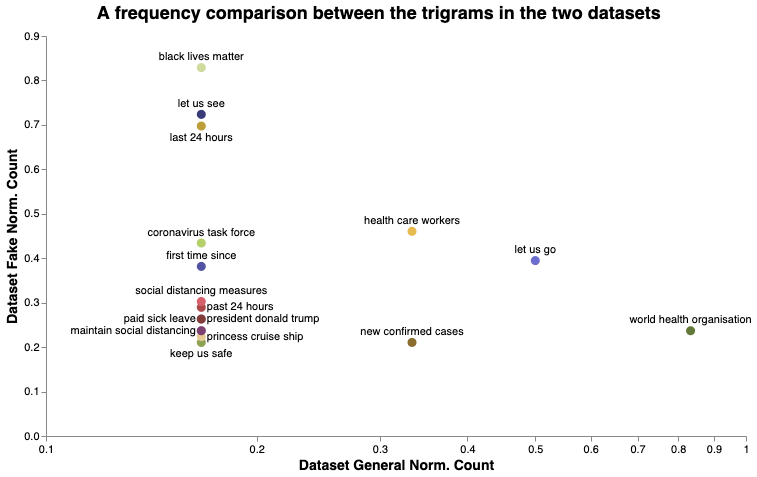

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AQQAEAM0VwAjgzjioAT21Q2CHEmVjx2pnEwB3OKe30435WUUkBAhtGicfbzc2bVkkTCQIVwhKaRA7WVkwsjQBGTcaWXo0AHYABlKZeBoyLDQAFnKZJAZMNggaAC84NDSkWVTY+LQAbVBxIO70NgZFAH1BlBliJAAbEwgR0AAVf0CEHrgADxxTdtJtCHjxWWcGcyzUgHFTOECV7QBhNmICtAqQABiSAA1r4vj9+qhSpRSgBGADMsIExQAHABOOrFeEANhRdQATLDSgIAL5Sba7II9S5Ia63e7iMgxNhsRSXNg4E5sp4vN6fb6-KEyIGg-kQv4whFI1EYrG4glE0nkkA7ap7HpMO5ZZms9mc14hKKKYEbGTPcSvVZiwX-EVggWQ6FwxHI9GYnF4wnEskUtVU9A4AzYSxGBhWpgsh5m3lW8E24Ug+3iqGSl0y93yr1K30Bf0gWk0ZArEIrb6+BhmCSZNQSVYrcw8i18uOOhOilsS53St1yz2Kn0qyn7dBkNiYC5IH6MkKj1amkDmy3vDtCwGJ62O1Pd2UehXe5Wq3PDkD40qn7Q4NYhUyYV6Npcbv5tpM2reuneZ-sHocHQ6YAwIL4HhxPAijaEgug1AWNKSNGTaxg6T5ru2iEpl274Zn2+45uq6DAT4YEQVB4g0DB2hHP+iDdHBD4rra650W+6a9nu2aDn6x5ETA0FXORf4Ab41grP0NHNqh9EocmTpShhLFZgOh64RgcCTpYEDiGwbjaDAdD3mJUnPo+aEycxu7yd+HHUhpWk6eOXE8bSekIQZyEvpu6GmZ+2HsUePS2eBkHcSRZHAjQKwrFGC4xsu4mGYxHk9mZX44XmKwqZc2iwsUF5wByaVOTFLl2kZTr4tiaaJZ+Ck-ugWU5Xlvi3rYlqYDMCgFSVcXiUxlVYWxil5vAqkXNZuh1lYzSJCJUXwYV8auSVPUfn11WWeg6maWN4UTQwU0TRAYYrGo7Wic583FfFJm9axq2+egyChYyFw2K4OlPdx+qwTNtGxQtl0VctN0WXdIBiIB9Dah9JzhGwsQNqdc2tn93UJYD5kpceiTKNMED1tpHK+ByOAdXRXVSUtmFAxjfkE9oRPaA9J3ffp50MSjV1o8lPlKXApDiK1daWLIigciEACSJO-Rd7MA5T6Pc3mbAwNobgwCyeB0zAktFWz5Oo3LXMDceKwJOOAFIGE2pMIEYTa6zkmvvrcmGzVIDm5bT3WxbThQHA4V20j0t6xzBveUbPQ4GwwIIBI2gRaKEbCay1HM2dge647IfO2HrsIGED6R9HsdQBMAdIUHmey9n-WuxGTBMJYpZuKCljmBWddl6uFfuVnSU52tIBNy32ht+IdcXDp+qKJ3EluZ2vdeTXA9sIcCgM20mB4xIo75QjnXI8HVd90vIMx5cW+MmwaXOAYcDTYuLPpw7PdH4vt1KSX4V3xO4jjPcE9wBgOMGgM8yaV23KHE+SlLxIEsP+PodB1BWnkMQMcSCVigIPuA2Sx9355ngdWdBMReZoNrO8RwZB5wPzTuXDOL8IHVzwceFBpDxjkO3tePmmDu7z1fitYGSkV56Cvk3EIYRLiKAYFAGs4gqHRX3jw4yfCqYK2PHAcwvgRbbVDDQZYaV+bcLobwhhuCBF5kDGOBQt42QXBwAUV4DNHJ71Jlg+hOC35mMxnY+QYFkA+wiggJgcjZoKKMUokxHjqb3VpFYAJQSLjAnMEoJAXJgk-R1s-Yx7j+FROUqsegJcDBWBsHYEia8Kx0DSY-WhmTwnZJUeHdA1hbAFnKSRTAIQEBa2cVLMJ0llHy0aSACpHSGbKxGVUmhXc+kU0YZ4noUAGBHTatoCsEAIK+FMD8EW4hAL80mYjGpc86meRyaonot4nAaPsCEYQbBbY9Iycc-pESzlDOuTYu5YRVkHNCbUl59TBmuzcPklWtk-HEJIicdkhj-mzNMbk1WdAIXyChVY6IDcU7UMOdMuFTsEXnKadxGgYFCn-gKGQXwgY4BQFIli+RLjFEAtOQ012ZLlCyEpReAwtLEgjxaIsVOOLZ6LXxZEwlaQRayCkaMj5IQkCjlhc8+F4qhmrAMH0IWEhfAkWBKFelITGUzLFW8120qIDAmKV-aR6gJ4qBOPfBlvS8UL1NQPNWMx5WjguGof2jz7bKpNaygeAlAkOJBZYJgSAoDAiVaK11waQanlhNiciaUbWxzzpgWAcb4plQGbCJhBx00yIZnQWAegLZpUdYa51gaE1AoHlmitY0wrf12rmmWrzE1KX-AwWwYjmrRpgHs8c5LVidr1vCTmxJ82wjqEW9AAgcAIG8MQbliAaB3n9U-etBb+4g0wOu6lecHHlVKCuyd2CWWNpBnOaIEiVDgQgBItWaVflGpdfuqBg1AF-u0KvDSOA1ZMBoEgOOYQ4bTCvW4m9LsB6AY5CBsDEHriwOmCrVYj1sg7qOfG79i7QbgYgIEDWHRCxRqYB4GDWS4MHqUiRlJIRyOBKQFR3wEATi0onbh3Fe7u23qUixyjHhbE0rA+8LkWaaMnOuoJxWigfHeELL4AImkP11vwwJ+Dh6VPaDU24EIEA1aKEwDJ5lcmdNKQM0ZkzY6VPmZVW6kGdjDhbr4rAWkXK1CAUc0G+Tx5Ryw3qpeXwuhWSUrM7xkV-1tP0fMblULwjFCRbE3fPzDarN5nCyl1waWbgBMqRlgj8z0AaPCppC4DAyCUsuN-Tjnga3pIDVpwFWXMbVdq7eG4DX6vVFkcVuLP61GkEUHAnSimR4qWntFsBsHLPxePBDSbHzwL6huYNtri3qSTl8CsQIhgaDaAMLoarngNNPNa3R4bFyZjD3aGYXwyb4Sbeu4Rh7vttDPe0n7Yms3XG0YWzd9A334ArBwD817QPCO81eJYN9bAS67XHBaO+F2Wuxa28DjAV9EeTRR41mcCQoczux6j2QROQiebDdyf7TKnM9rzBQKn3EaclhZLGunxrMvbfQGEUglxqhxCAvAAiPzIrYr+fxrH72uMSbxvIdoZALQ3GA9qknkDCOK-69-NXFo1t-aFVLq70PSvKXB8du+UiOPmFsK0YIGu5m5MkXYJZ2hgTWUNNUdHu6Tek8IybW8cdhcT00n5gQc7AUB5D8ZyrFBfNc6-UNwjOkTbY12j9ozhT0uJ+l29s3LhFBlJCPEVeIRYikEdwSoZ9BnBWLphaX2aVrZ0Hhkbz9efTe5JcBlbVTe4At8wCGa4uoqL7Kr6qtlfsB-XhH2yXwheykT+c0pe93KHTajCDl5AMjl+M+PBnjpakaV74CxciAx+oAM3EFIt6p-2vUhpdf2-3z4jKF0LoH3eHMf59ybAMI4GBCvgCqt8o69+vOIAQB4EAQngo6x2-4X+fGfumuZuIBsBN48BNifatg4B2OpmWBkitgjibekuHeyBTuEq2BEOyAlg1gsi9iM27emmP+XeEqNBxS9BSmAEAojIuBhGdB7QXBiAPBTIb+NAH+iBMWXaMuZupGP2FWx2KSXIfBZuYOpYihU8z0bAoGX0pBzB0hv+EqpGXIWhOh2gFof4KhuSYg2h3yFh44zSA+0anOTBl2LB-uZu9hxSgEUaMaF4aUCQBqzWvu7hKBuSdyQE-gWAMQ9gFgVhbB2qlg+gngVqaUlK8RQyyRgkIi5AYWt8fmkecG-BORXKWRP2+SMA2eGRrsZRQ0R0lR9geRng4ehRcmKeKk9R2eegt8+Mu0EuTqbhBhrBmRPRHqD2TIWRBR5U2mKeOM2oZR4WsM1RA8tI5gEMT0a+oIcAdivBue5B1ersmxngOxTIo4xAUWrhGOQxHhuSsO-MMQpEiyL62o4wMiPGlxIR1xYREqEi28eMLgEUsOKs0wwkyxIMPe44lKIS0+hwYJ1m8iMJE01wBQwucJqUNAooiQcAm+gQJETiHx3+XxFBQy2qFwrw7Au0eMsOY2aJmM5JOMVJo2akWQu8BJSBoRxJrs1JzJjI18UApYLQjAjINJexHJBxA84xfJAp9AFYAQlg0a1gFYFxehgxh8yeZu-J0wMpwp8pUAip9xkclwkhc2gONxEqCp0wBpG8RmL06xOGbJUhapMhuShpoyYMr02o8cQR1S7JRJ4pIMUMXg5gfQ4GwZsQtJEciW18qWagBgTWPpjp16wxrsdp5ETJFwLJ3pUyiZ82ZpaqGQ2ows-aMcdIRZCAJZ8Z2ZJpsmeZZqhBFZMQ9ZVY4ExA9pKpVxTphhQyZZDZk4TIxQxQtIlZwq1ZFmtZKxrZ2gA5Q52g8IxQsIEZ6A05dIc5sIegypAxHZSZ45IMmQtIKS+csQ5Q2k9iz04Mb0bZm5nxnZyZA8EUAuyW1J6+t40ii5IApgsQjIrw9Wcua80aG5taqp253xNehBEOiAXIrIOUjIDA4ib5EFrwUF0MZAsFsixBb5yFqFnSsCDx6y62jB7Z15wFnJKxxY0Q-OdAYWV8Job5B0RSn8xY3g2xyhopfpk+d528ymgEGZj2UxBahGPmHGYQn2EsrFN5O5SkpYL6MREYFw+Qv86ib5sQslEA8lFolgJ2JaxpAONZIFKZKkwQI0Sh38+IaI8eWZI5OlY5elEp4w+oNwpl5lKsDyDpo5DOZ+IOZlEwzlTgEiKkLhhFhJ4lNlIMXyKuG6p6pKNg+wYlxF-p0CAEW6UV5ZzgSAf426rlVl7lD+TS0VqV6VYErQcMtFasqw3EfMegepfE8CrImQ4wIpmV9O-mOVIAugVVFEgQtVABY2wJxob5hY44uMmkeMFAHsl5gFW5uZIVSkGq4UjcHO8xrIIKimfm12+ahGyRZgysEWiFPsgQMaOejV3OJWLp3EigyA1+UARmtIbAugKgd1XQBFV5QVcV7Fp8Zg11Gkd1OAD1DipsgQXQjegqgVvpwVJFIM6yX191nQf1EiSAgNNK4Guhz1oNr1K+eY-18NLwJc5h4E9cY4tFt1t4GUYgugg1VwhNZNPqMS6yvwsVU14NSksIaIte8gvsNOX2cIaISlNKiAhenNzNVgUAb5YOEOfQywj2VgY2qgbAb54ttIn2UA0trQjiL6b5St5gMtqt8qsgHIu+9Npp01eYyA0lfQettqaUAFwRL1DN8VGNutqgFteWHaBtuljNqUztIQotfm2IWO+IhGGeot4EsgEtvsIt-aMS+1YWJKlwb5UdegMd44ltb5d1bISdntb5ltPyPyFli0Ka2IBdhdRdxdblpQaIWYrRO4AdIQu0gkytstrt1l7tx4QdJwDUzgABvFjd2VEBbdSWOhCtVKARiQb5A9ktoWgRCd1wKd0avgJtJoqyuW-M9YtFt4fsE0XKpYuxR1SezpEqJcm9nFuYkGmdR9NsdI1gBgb5x9F9ycxCJGYe3dzVEBl9vgiuIsWkLgcQfiYGPND9n9KkmAP94GNAoDo9gDwDoQoDBuH5-V0DxldIxQ9AecsJT9PO2OCI+mgQ0qgsoQZgGq4xb5UQmkLI5Qa5sFccrgb5FDWdLtO9neElHt44GeOALQM8lA+dxdXDhdpd06kCc6C6ZuqSZClul9Nwol9D+xb1SkhwEepQ-hCQF1MB4w8gGFJsEASjBgKjHGagMa2lTV6DG1uiQEngC9EjINOZhtzdCylpagT0guejPFYdaDJ1PxujC9H2wBbgtFMwdg0lRIx5DjNFLj6puSfaeRW6dIFoo2KdygH55hT5kW+jx1oT5pReV8NwysZA6jo43jITe9aqZFfE3EyOVswt+TXZXJhwJTgunsV+5jKNljbtdtx4Bg952oGTegngEU048FTJcMEGooDTE1RFtt0j5i9g44qswuo22kCDh1FjpdhjGpEgje44TAbpL06uFTt54JmzgEpJ8Q411tqNYz6NxsHOJYGJgkb0CgudZBea0xbWAe1zVgtzfKRwkcpmyTu9lTA8o1JET0Mco6-a4EepXV29izWVz92O-+FofKUJD4fQecwU8C+tkjYp4zx4cL4Gwg-aDqU52Ib5eLzUNwxQqaXIvsBiOzjDx45LOUigVL44HyEgHy1DEADlc5vtHd4U6gItCD8q4g5gEaOdb5XhEIuU+mEwPzDDRtx4oU4UIQTAJsfhfdrJULBjrjQyo44jwJSyw5xumL5zPQYserwkccZYjm+I2OHVVEeMURoyJwtA4ZNLcrPQDrIQTrKJDMFSOarr1j6AVQ4gHQDM6iDiMC1LGLbFxrUw5rpg0wNQmG2a8ABrDz0b++PQficCtI2BVOpc-rLTFyObhBeb3FvhAVjTSzWrrs6yWkgQY0CjJBlb0LyziKFG1ascp4pQKITj9z+hYNhbeEcQFa9b4GMCTbIzNtVjg7754gdyGiNw3JZaN+t4fFMxqhFsYElwUilq9glpqb-baNGb60rwD5FiL5bxkmvjbQTMGrKTBThx+Fg9luuDO+1iCzzbmrqTQyxKYEpYUcVzoIa7zzZujM8qyA5GQLfR5TUbA7WLPQQQ8N2oCA0HMQDAqjBb8H90qH0q8gjZRMH7k7pz07WHcg6Hb9Is9l3gMA+RmHMbcglHBL9APRFiwgNKHSb5zHKRrH7HJYpsGFIsbH0ifHGUbLdHx7eSnRjR3giYVz2A6rn797fzh6snEG8njUDm4nHlg8dAm8Gn3FYHnHemYHHdxzCZVb37ucqnoGTImQH+35XdsHR72nMBCQQspEKFtTTIiQdBB7QFZzEndgDg3gmkTg3EfqTnAX2nrQbgYX408gugH5hHJzTTTdM77g0QFoWkfMrUBgMrUj9HWX2gOXbUnCV8LQfLWnLVRXqwUaQrI8CAJcp9T0fj44ZYimJgb5p454EATANwRowk+XRrEnvX-XrIg3PqOyXWRD43FOk3289efiq9U3i3MS1OdiEgxmKgYrcAWkagentim3rI-Ln0yHOFp4RQVXEB7BF3ys+IdQl3kXJH9Ht3X2D3ysNIE7KXFnD7A893ten33gFYyX5nLb1b7qli7wW+0Qp2EXd7vzuzSk0PegSy5CsAVuCnRHqXPd2OGj40qZNnnHF5pn7u6HbQb5yAeHGeOL7LbzABGZyu6tb0xG-WF43EI9V3uPrPwGk92zT3zTpHPPfKhz2Dfb-nnYvta1hGIvfQwBMBY+VtoPX7v3h6ov0BoBGBiypmpEct8vcBWvag14vLQ36b2nEwygONqdGUkcEUtKt7inCPtLPQVv44NvNAdvJeGTtFcuVoKF9exl9gg9wHRRZuaRH59glggEtgOkhoeXm8-RWPP3ynSkUfwGpEKscfPTTItIGkFYvsT1ifYPlnA8bgmf2oOflp+fSbfr-PaXpHFfef4aw7yssQfVnPhGIKybMRxoIXJENQivVZRfKvCV2haUq6tDJvcH9Has8LZs0apEq6gZA27fsh8-Gjczn0IQBgFAim76k-znLVHuoXEG9gmU2IFbhfyvyfeY1sAqc1Gh38wIcQW6cdKSj-z-vgdyQCjgwflmhGT-x0bQF-1kSxwTYhmWCgP0spX9EeeYYAY4GDzgC6APqAjn50mrPcJOYAg6EgL1AEtig+IGjvvyi4tVk0qaafBmicAKldoz-TbvBRLS2pKB6yGRFv0QDew5aepKgUwMtzIBvkWIRLkWHt6X8lOMA48OIgYD2dAgyrTRO72VihRUBozdAdpwt4yCCgeDOrH0DfJbENYkWOxt50ngOolK4hRLlo3WZsB7AdVbzrABZDFhR6pgxTNqC4BWCxEsiW8OoJX7WElaxlfrvYFXT4RQIRDbwSrEAagQ-A3sBPt9yH7X9jwvghxPAjGoTQcCbgiVDlgsR3VxwdRApNJ0gzI4Gq8PWVgG0k4ZCikWQiRBpW2JtBEgL6EHoP2gFO9A2EdJwA6wmh2J4gEUDRtfQ1RmwyhpmA0MIgqzyUzO1QoQbULdhdDrEIQcLH0O1AnBV2iQkknlDChoc8OwsFAQYPEEYELEkgwyi7wE6j9EA4wxOsV0IEKCWqLvQ4dRxJRyCp2AvejsQBLwTYxuigUErMJTL3Deq5rfUuSgEHhCmqfDauAIw76zdikSpOJuMNnqr02MZ5XKPrjuJitqgWAQSkAKVhhdYYZAJbs8P+YshZAMcIvFMJFhjgt+tIC-t8KGFusAweI0ZLiUtR3VK86IkGJSITrnBxgKdYxuYTHYN1a+OPQjOMAvAPpgaDvPITO0jgTg-AsDWkQxkAJaMCspESAYa1N4tVKIdIVoZCXZG5CCuGA6UfpmiAoUkkL6I4dcIk4MBgQ59MDE4GZzeFSkX3JXiSPyFClrEHdVFL1VBCXDiO+oxQdUFICxBHEaGE2OYXzgU8hyqwJGvnCqzAghgYovMICw4yGj4g2gNEAIB8ahjwMcYr0fAj1F196OyYvxKmIbxi80BrolqlmMCAhBSS1I3MfIPzEQFpsteWgGe1TxtAkMlowYY71JEgAaxa8NPlJQbF4McuaYzkWbk74Vp1ksgIBIAWIBWtyWAyQRtYT6Aji102gUoGUD8y-Dj4-ws3EennFlALwMVDkaUGXGLxVxuSQ4CYBHheZq+KbDCmEESQXA84WfZyvIBXrhiRBtgVkINSvgqCQUdWQmhFC8F1ZMMn4x8T0A-FB4gJHGDwYblVHDdtOMCBxheDf6+JXA7xCCXKIgICA6gDQY8rtBuAIBkagg5sfkJRZpDN2j-PvrUAAm5Ui8DiBgJHDC7TYwhVovCel3d6ghXeKA-TDhOJEMTSOp2JwLrVhjXx7EfI3CQKNI68TZA-E+QOBjJr9UJJ65cwjSJ3GtsfiFsG4OIHOBRB9WYrNSSCUyaokyJoMW0ipk6Qkpo076DftDH9F3It2XzHQWmRvAzdHhPWckmvAjD3JIW-ItUdpwkk9Y0o2xcorEHR7UNNCEYWQLqXgDgNmgagWHrEkibjhlh9lTOq8xcDYAYhF5EWnCNWQWhbApYW3DeDuSSDpKgQYmmIFXrodLAsIfEGWl5YSA3y5UyqRFFjjpCGiV9PSTePqk0SKiXRPKb2JhYCVTYc9PqTYlLCuCFJ4PU+ANPZx9AMyL6RsVAOtEzt-8wkLRoMzrqFgAC1gvSbXRuCZBOMlHF8UgiDw5ZnGI04vmNItTfwgsaFEuAnmOnD8IxY4YnmxmlRgRAgI6fEkhKn4SdHpMwRQq9IaEKAdczo7Hj1LNxW4S4paC-HVlXRch0gYYdifROEn0dGY5w6cGZNMCOZYQsIPqJXSnFJCWOUqGVMQlIClgV0dkvSRYmlTSJCZfsDkHASNAmg1Y4E9yZBJaooJqZJM+4nTNjwQ5WoCgYqnpM5kMygevM87iiEe7vSD+EBHmRyxFm15hAtIMMDkKZnISycu3dfBTPJqTN+qyJQArDBwrWxTBsgEuLHT0lbREgeMayYEEsB3IZgbCaURhRfGWzERNs1YBqJelLJiW0wIvC7Iyhuz3gT-cQCCgwR6TfZ7uWkIHKYrnU6JTYhGRJ39nhzrEKLJkBLQw43TIhFyV4InOK5Dl+pb+KkHpOTk5zA+q6HNgAUvbX1MRFrSbD51PpVyn8rDfUDKLTYfTtO-JS2FdXAgiwKwNwAAWlBn4DDZpnE+jnuy7mhy9OfckIbIiMEaC4gvczivAknnhsP+4+DaaSlkB1AgRy81OcIIWRryN5oyegISO6mKShkywPUsGOpQ5c2M18LUtbH8pEMFhPnBLuRAawF8OJMc7To-LgC6Bn5JhVoE8K3nDCLEhwSwGpionaBhmb8jyS1QUCpIN00lauWTLy5GYn8nmKaJxz-BACUkMSXWii2oFwzo5UCiAnLNKTMhcFpabrqUDfKklBC50iYNRmDkdEOC+fMeLDEbheYww6RPSXQWYXBS2FMFBVI1Bo4MAuudIcLt-NaC34qhA89+S1TEUhdJFBWR+gApbESL0eiirSGlCJkQwj5o0ySpVk0V+xtFqM5fsovyFqUzu9XLGFulUp0AYAwEUEGyHsRcy4A+If0ZYqck2L6A9ig0E4oZkuKySZYq4emIk4aQRY2yDPJsWsj4LpFhC7HPJTtGoIs0VsarCLReiNlLx2oTvhlXFlECICwsDJU9CyV-tdOmPSBczIgK7RDo5shIF7nWIp0REmkbUI9WiBqtAlLo4Jdp2VZsAmQrpGTiFPtkZR4gIU7sVYiFzE03yq2AQvi1LTtdWgUcdWpt2mW2pZlHODggdDtyVdTFgoyZvKWVgbCr5M02Uc3JapIA9lIsSjHjA8CRsclxw67qsQz5zyLyOik6b2ho7ccDQm3MFCAjJkOIwBP2RzjcorHY4-l8ASWnnEfSISlZxyvJVYhFgMgmQjACFB6x8ZBIrgrfVXMPSpRhL7E4IrlM0lHSAc2lQM4+bnHumvBTsB1GxJ83Y7l8hWdpHbrMyfLUkWiTzG9DDkZUcrslUKx2HuKxnTEcZQyJlbMyX59MHES-cBf4Mj5eBKIcQCntKo6HAk9kzIsmlk1vhOA7qfsQGUn23m1Qu28BOmOIOeW3TjwfjcYpqICX+jMSVEmIRBF0BKVYY+SzlJ-1ckl5TA8LLEh7PERMUFKlQt+tsUmZgE9JIBd3ksly6+Afg4GKiSxS2WkcI1qyTQoshpwmxp6G0hNf2kLzJqbgmoB7AoCNVpymk6a14JmtuA5rpK1sr2UHJjX0cjQPVbUeLBsEUCG5SAiNYTQOb65eUanJcA+KrUScO1EUaxLg1WJ89AVHSlqv2q7XykhWpJRUv-JHV9jEU2k9eOcC9Iz1RQWXEvIrKEmxLCMWbELNfAHHniWp9y6wFfGRmUIFlp6u0l7QQZRyYl5S7HMq2cK2ISUhMFoK6QWX8wMCmgz1qj1vVHKJZ2Ob9ReF-VPQ6Gc64GS6RA1MgM85bCZSpGVinzaU+uMIHixBFy0VgZ8NrvrnJRVTol-63JTa34iAE3lC+MKG1PVoRQp411KGXH2+U9rtO-7Xdp3LpADctVEQnVSAGWqurFAIsBwKultbgrtx4GklQPGsS8aF+1VRKuvxqWI4wM3WeCvxE3TSaX0sm4XFhMDGZAvh8M7dRu1O72NhKYWWVXpM8aVpXelHUXDPTM1IY8s0M1wIVKkX4bbl2OCxMBhs2vBph9mm4KRBNhCbuVBG97K0Co4uC4WTIWQXmo42PoqNczS+C0DjjIAVRfmpzfwSCAQ51CGjbpPRpOWm0VgEadnAByUqMdH+B0GIAgCJHab71--YrViMtTtdxg104TbooSyhzTM8OC2DPRvFqQ1YWkdoK-PK3Kz3sXWjMlu0C36CGFnGTbjQFAz9rrFdeGNLHE-L9zHNQKwjC4Dm08TTxdMpShttZCWpAIlQ8LcMLGiMgSUt47iGdvAymB52-Lc7eRDnZsBG4nQYwKcE44eAkgweKDkyL0nJqmQKHbkSCAS1bqKtoHCsOBn+1VY9GctYEA+h3bs5K1DWl5eYk0gGg38UrSRBwVzCtRA8WmghUDtyQ78GA6OwqUsmFxE5JEH6jHcTuJqo6CdlwcwK0JgA0hetOO-rWbnx0+o6dpEBnSjpxaUZhFxmofPTsZ109xgvO6nRMoxQiwYi2EvDU3IA2EZIM2qdoJHXIB6Ywg1iV4ugjjoq7uKau14BrpEaAQ9y4dJFXCNGSgK8Av-TmCngKAOiDoyrVaWwguBVFjNzAQrI7ugDSd4gNqK6jVLRDYgKpFoU-usjEArBNQKWcucFhwYQY7ASlMMNHvAxxkEpdgS3DcEKTTCtdqe+wNMJgaB8AViW5bWbjC2ht+YVoRqRoJIiJcpaembYvYjzgwd4dxqzNnfBQz5B6AWpTDDiLcmA6Wdf+RdfYD95Ikm8f62Xf5tQIpZjxJcR7LeIikA6ylPe-eoPWn0tBogQ0mXYe1H25IZ9FrbBQPkbnr6ktrOvLEFhuBdS3FGlMcPKWWoU4CtrEzABgpFhD50FUzQETgtLmbKG9+a1sfIlYb26r8oKo6R-o40-7be-yz7IhvzgHaWxDrXKBnkgz9Y8FTCvXcPv30F6-8Ulb+LxPgmuBkD4vVAxKnAP651kiXIfOvjtXGaNkJBlIT9gKB0bADgCkWN-KqCZBg8bIaqXpKYNHY088A4DGxpqEtiuDscHgw8SZ13r59J8hUsGLoJ3VUUn2Hjq+S4USBpDpgWQ4J3Y6W5SAc4HYUJ06EaHGKBBoldquGEGBdDIQfQ5njoAK1DlI+g-bkjMPwB2gVwCwFg2mAW69JBmbUAIGPJjQ6sIhpbaOogLulpmDhCQMwo6YSF0obBzLRARIifYlcgLJOQaGf6lK+t0Krnsrm1CjZGBbaRtlyu72pGA8sOd4KOHHAIhy5JR+EDntxK+xID+QzBgHyqNrw8mUR7HPUcHqGhjsoGWg-nv8NxKOj0DdRnvtwM9HCMigTo8HlE7TY5av8HWRkGQHxS9JRVHrCNvqxnUcDeY4Y2bhwErH7AySxVrZBKo7HPYqPLbixKNIzd9W+mPLEgDcD17uj86iVKlmuNX4bCTYN8oYCwFB4dEVHTdh4Kkn87Jm2oedLXkS638I+bxxQISHxAVSmAA5LSATHs01GZ2CpbYnZHCinLPWyaxE-XzRMM6FGaFGgi4GvosiM87pelRtJtLnkrYrgaxP4PuLRNflG8BlQycGWSJjZzRrXI8V2gicpmpjLE-RwGOBC4AC9GvWIBTl0GWxStRBJ-GOxXwF8IEMYtjtEP5GzcdQHtnKmgKz6Ujcus3OqYVTRAiqsCccayrkwCq6yzgbQr2wp7QNrA27bii8dHr5JCwd9Q3e7ytBHAgg+cWnOydA7N7pT7plFj0Nup3UADdxs8Maat0F5HT2IzRLtjQpHbaKcQGYHDAxPoYP8UreraGZE0BkREwrCudxA0SGgXoa+oY-cZ-awJGjRZy4wYfY3DDih-4SwOe3Y7fwzqpAKwygY2MukH9TZnSYoFbOBDxEt4FyuKfyFtieRauvfmpz072zxzuayc9fBpBSyI9NwK9cYvRmzpwzlMfgsz2poHSSUwQIlv8d3PnUIAqaKbW1Kkp8nPpJZJkPrrQpGg2Tw5mdrecLNp1bJvh6w3gaGSL53MqCNYJ+ocRbHeDc0riXEBR5+ER0KdHdtpH41GbvTuSEdORFAsnH4KSF-yDUrfTVm+D+QlwaukwYJdAGl57Tnha-kEXQg6yaNDzUS5xAxE5Fq-OVGxALk9JpEJANGm0D0W1y1aG-VR0JBjnN54G7Gc7EIw8XI4au25G0Ay2PnBerk0ZHcmMyUNtU2ALo3ke1PhFxL8li0IpcoZAXB5GAqEdSc4PfxmLFFhQ1YG-kdAUQxZ9Y6Was7YYOCUFRrjAVHDvn2z1lgeHdX76CnLUoaQvFxYJYW8vL5Qwiy1X8syndRh3EAWyEnhx1Ar4VsQJFafRMBbjyljfT8WolxWtuEORKzmMzrmALeTgh7GGG6wP8SqxxKnKWFTLcRQMAsOHZmca3YtyrxPSq3QEOgn9nLJZiDRKkY2esgwJBk9TVeSs2GJU5GS8MGI0R2QGdE105VNfO0zXprgkufcqdyRjXwIE14zHNdmsbXiM28OWqtc2t7Wprz0exttb0lF7AeasDMwNc-M1t4g8ONJYlcgvqqPTeMf8rolbztawoupNQD8BIMrqg1Nqb6w9tFBq5WguYYDG+Qla8jr4moRVpnVNiRBogcqdhpw24ZcNS65dRUAJfhDFEOgakSwaerxG+bLrHZh4wqt0AmwgpKkeQNpZkUQEybxlMCF-SpvdEsgmF4C-R0Zvfx9ALN4DfPgU1cYirCIAQJbniBhQap8IIW0GCrTcp3erNnS9pzJushvWViEPKODWPljibQyLRvEZ6ElyntjiY0FQxNkscYASSV0+8H5I1LOOrLNNP2j9gE6bwBgalBaE9RRW9JdtwCGsFu2UQnbcAF20+lzDXLarCOtRPzEdtaNfb8ViHAHfHAUKEzuXAZiCckQR9srJsgfEnZ6qklY7bhscBBizQ-lZ6QViAoViKucYC77uSDN2skv0dS71R8u9cHtYq6fD-VTSFta7n7DjMbZ9q1maUimUpsp-L3npNWydMogaIuCxKmHs2A1uJsQsIXbiWT3-EFsQyvOgo2L2Qg86Pu21assdWhk69oe7OtDOY2qoOp6bHTHNYRhO7W9yXkDn9pm5Om59h-tTZ025JkAPGsDFyjd6fZW9HqQY1ve7sRjTYD29TszY-Kz2BK92scKGR2Ne1zALeR+7jsoL1tgzEGfvhNOv0LGPUHlk27A84Roz2DMDjlDg6cAaRLL6t1yyDDuLmFBDawRbR+Y1s1swJIQwhCIwEmgPQ+qyr0pbloBN29JWXevOWsd0GBCwCqQ8h7OdnvBBHyAWgOFTVicYLD60se5rexKSPDy+MWRy0KubiAytzOxaxKiGg3BGh1xw0+g56K6nFU0WDhijZRtuVMZrEbGdiEIymPogeqTe6Q+3spkOQnNDKT4lL6UUvTVdkJarPMA4x6QWpcXTBruDt7V9rD7vFrbW4vRaC5N6Nf46gkiwGs-1uer6dMNJA5VmQduaQEdZnVkAvKDjnpNRSG83SrUMpxwSMHKHZbNN7HAnLxgun250Ny2nBTJk0BDg7wU7GGqVYtBWgJDoJWQ+gSdP3gUfQvPKg1RbbsJKsTAIwYQbEt42FrZuOokoaKWu9C1lS51c0jDxLaNksDUHcb3oA9n2oEk80QYVumY4pacRDiq+1sZPZy7aUQBZo5KXNnKVoZCiyedbsXnDxSjSVWUC-On0eiDngo7NRhQgXc4KlEkfBuQvYJvqS3E9rqxwOxDrsMwKlspsOJft7vFQJCqJvDOPasvXxL6xxfm3WQXzOIMdxanEu7ApLxQOS9aDfPlACyul6yApeMujsT-VQG9MOef7jMALzl7xCLAYlp5XLpwEK8tRcc4g8Rr+joI-XwJpEuoR0QaBNgRg2oNie9PZIcW4x7nar+VEUwD6cW3D3lIDR4K24bOtT7z1F6rPZA9UY4YpnlxFoZeR9YYmyY4NPcGftL8XgWb4GkI6KFDfAA55q+MvYN+umpAb5wUG7XiPQxJF91x3-ZEERvWoVO6N3jHiBAcTrFd7Nmut5ovowTCx9cI3lzXJ2XrNAp+ofb7Bcic36yHqiW7Qrb8zBatoZ245WL8xsXdgUtPW8UwhA6tdTp+0YT4BdvWR3FQMLtlweguB4Pb7lKO6cDAgI6Ljpt-G4jiBBSAXgWdy-ei31Cd+Elh18MLXen8gom7+wMrECByzLgQUCyVBRpCgg30SmUpH7G951zCn4GYdTu5bE89zqz7wg1xioVfvH33g+axa8GtDI0nbPf92srfHIudHQyFEPIyCCcVCeQa68yTy469v4HX56oNRx6KARaQ0TygiRtDY4fKGo2ARQJ2xdPQLQxRjum0ELA7dKPoGaj-xs4y0VP4QEBgjyJ-txu6rgEtj5HDsh6lc1VCxTN+WXNRBYJMdLWXuW5G1sz+mMhM1pBTSYy6p7+19-kLgP7lOkEgegHjCChiTUPKL0TaxJTTyNWpynvF825BhGelPscDVJB62dDJgQbVH1GRrpjmT+dzngmL5ThGv9RkN+ZWKGFxdvOgPKZdcIsgOmz1566tFoIZvZoJBLUwN8nsHOYAxEMgSSIHuWVjcLuuP6AKNIy2pnci9HxCUsLpz09QfXYBX+8fcmSnrx1KPNIr1V5LKrOAifvK2xDn5LMACR6b8dyDBRBMAnAOX8DKtpegOnAgs2tJdsL0mDfuKpwtr0wDfIwfSgq6dbuoBLAqRmvXC1nBtzQpNfjxkiD18Sqy+DxVvO3isMBpKddeZqJ31hm6VYZ+OVPgoloEZhu+e9GZZnxd8c6rDFw1g8SHL03lrAUb2vqVXL1vR1nzHzv+CZQEljjL4wOPmX4O+62bM52ByxQXDz+0R8DluTb5JH9yd9H99mRr5p8mm9ygxMeHL45WOb1dMqwap8jJENR1pCoMwfx4GnwfPECHBwI5Vh014Pc6PphOkq3CuSmE4p2GfCyRJ9-BqUMwyDQv9AKcPWWAQwIb6FEhl89fmfJKiU+xHW5pS1UtdiL13pitu1Xa9JeLWYxQBNjALxh+7XI4F6uv-NAxpv4RF3LFUZzuXr3g7+Fnt9y-HfTgQ37Z8tcrFVZIKfZKGz220nRkUfNeJTxK92ea2tpYnt6hFUhuFCbGBgHLLNbe+gvA8baU8SpyaeMCL95iY26V9veccwkewdYE3gzlYNTFyR8AS3pYqywKP12Gp4TooPUqMaJcaTgPFJDTdSrJ9UFkSCagB0Dpvwr34Hz4sZwCsnNo1gj19-R-+mcf-+dT0dCHNtDr10WytC-nJ90QV4FRPRb8WNzgls3Ov5urkQXcpaH4DagdwLGDKlD7oeBESSwXknJwhpf0MrQxeLUG6IwQcvtm29si5ZUiO0G1SFUfsPI4P+L9NFR-+6gDEJABWfjMAw+Bfgd4HQaTkVYm0CcpBh14b0Kn5W+p0igF0gLgOgExEwGBaDgMeAbEAEBgkPYCwyAHto6R+6fikhAIZAUnbcixvp0BgY9fgPCFIFAVKwRQ5GAkDPoweg9h4KJ3NDCekzhEZjI43sGxjguj+ibLJwOuDYj849eKWAMUivvt5w+6ALNSsaegJ7aJACQJEYgB2OP5B2AsXCkRqen2pL7vkdiKKZhYWgREZ7ehhhKbZ+z4oEA1upmKoItCgeMt7Mi5wLSjHQ8qErTlC6tIgh-kfgdJSu+87nAGqB+YMEFm+30nQR2MN4KwEgwUcJWiro9hO1oJMGCqxo7cGQYCLLUlugbBbmwhARApItBNwBkqpGJHxGOZgejxXOoEMUHEEE8MoCaO9sh4A2IDWPcRs0svAkEMY0MLFKI0iuMQh+I5gjzQlw-QfICDBhZIYIOcsASoFHOcgCwLIkT0HZw1OBpFGQR+PvhDSX02oPCDyMs4MAF3egvABBvmx+DoG2BNZi2ILm2RHnxhQ9lpbDcOVQduYIAYEP740OLlsr7G0TwaeL3AeQfv6IonwUdjgwnHBBTXwlEFYjwAj5P1icct8Ge5UUgjsriPOdwXoEbUMgXCGfOPhgzBhBMwZ-qohdoo8GYY5rlQHrBSkM8EjwR2KFhOqGAXQ4Dw-8GSGUoPWFGoviWsvoD-UMqCsisyxMnAQa+GkHXo80RMjTIYEnITYDu8VMuyGkyZgX0BZqdYBYZ0w3QhQCQhH5OXycg85noJL+rwYX5KESofaic2u3Bb6AemAQxjKhNwIlwtBjiD7p6ShgOvLJoaIPfTNCawWn5JoXNNaGUUF4ElaW+lIbuQwKToTgBX4ufobZmBXofrbMSzhm4Biy+wdPxXwlgLO6BANNLAjdS5bgqD-8MwCxa+UMYaHKgYGIaXRxhhIO9gphT-GmFs+JsNu5memYYWj9izfBODDi3Ip5gKU-Vq6EwgxYdmEVh4GFWEWg7wLEAfWr-KoArI6qJTatan0CqFd2B3oT7w2DxBDomyLQCshQEEkjWG6hboTzB0EgoUoE8i02ouGK4XILpJmBK7HEztBX8ti7BGyJEwKUWu4RwRMOl0kN5Hq9XK0rMgzAPJr5yKGFjrW8W6CGbO+EQR0DMArFuOwhAp4G+SvhjbGvYog34QTrjsPQimgp02ob4hhAUXiEB1AL2HpI-hH4ZlDxiChhcZPkcfjuL1hGpNuYlyfaD7LkAlOpS5ihrbthGdCKFIHhQUvnDKhdBeYNvx4RUVNcAURCTE0aIhKzHREC+RXDbBoOZgXXqpORNGCxMsXYdrz8ktoXqEY0-HvzD8RujNfApactAJGSRRBAYBRet3mZ68qtjvyow484QgBwIEFKy7KACuK4D0kCJjpA1AOoQSF2hvaFpFOBH1sQjWI7AAZFwiDiHlJ787qlQo94reHgxK06ULrgm27QJ-Bay7kYESq4XkWbZgsX1m9aV+FiB6IPECEkUg8ouah4GlOW6G-iaIVbst6aiSxD8qKA2+NqAZcKPNcA2wWMC9ow8XcnlHPO6mLRR3Ea9FcjTYfHDSYnWxxPjAnEjiOeotSkgcnZiAMwLXZ1guRJRGYwnsh1FfwtWHgy3gvLFCRPhtYW8HYstjOSSfqw0bU7QE8QaED9RgsLrzzRZGnwD38JZHQDJwFISv584i0etESAm0VD6JAfiMTgtSB0Qy71Y8wTwERgxRmVEnRSrN0o52QZjLbdRGoI9FtcH+C9FuRawEMF6Sz0bXbCUP0Rka-0XCqfxBcTogkz2ADcBhT2AEMYHqjGIYMYCah20eNE9Auurl6qAbPNOp1gr0Sew6MNsB5YRQxgPhFMR1hDeI6MsCN8jZqygXYH5CjGs4bSUpwVhYzsamIzFO6ebmYEcOHgNtAEmQkbOEY0QeJR64wxxGUYXAPkhDiAW9Sn0I9CYVJDh6S5UmuQroF4A+ahhgXFDKDKWGKBE+IvvLVpwEuASfSIKngG5hecx4YgifKRER+onhG6sjihsrzjOE7RrVJOCK2QeMTFB49Rvn6YhHGlWG0h5ovco9uFPI8IJACepqFgQdyA4px0IcYiIOKIXHzJmBcYhVJKxZAK1CFhY0YX6JxycZrDX0GcUrD6YmAH7xq00gU8THY4hKZKq2+IUqbUBdIt-BEy+TlLShc4Nn7C1xfgbFxAC6tB-Se+lRq-yZA0QLIDCA5doTapxB3r3H9xdqFOqykGgoWCjxQTrKTPoWjhXGEheYN7Exw4ELIjGh+vpxGf4deFI6zxQ5qrGdKKuhQIWo3yNr5xRnEfcqAQFAMQiaGLUnwBXxjFHEb9hv9gd4e4qsjix8QTzijGF+R-FpAUONPG7YVUb8eTi4xrYtECwglwPiB0gzGp-EHeYCZgAQJ+jvuypR0CREFQJSCR0a3gA9n6Hkqahg4aFWtqA6xy0B8r2bgYHouBj+yyCbMGkJocnSChB08jQkPO8sssBzxfhg7GhBK8QwBMJgvqTHmkN+JwmkkhYpQHzxpkYrD64AiRmT0+3CcB4zi3IuuJYgpQCC6SJKZOuhyJfKCiDbBoqj1RQ6gYmCgJeZgVok+iqsG0CW40ACYAcRiiQPDOemgjyJecq9KLBkk9BJIIcEmRgIFfa8WiyBs+RbrlFGJrRnnrPhswWWTjC3TN0TnOnMWWDEIXGGCF2ufMQ7FaMoXN-AiwQ-hAJQO0wbTEzsCSZagoUFhg4CxShWhQmf6dXLuzgsSpP4TAJFpMUmXgyCtEmoxAYPfEpEkrnklexyODYDAkFVCq5+wwCVECtJbGO0lvCsgPkD2ufiZ-ptJjFKxr9JrrtSgFxZgaMmnknzEgp2onIB7GpJpHLMmzmGVg1GGRKcfbHVJoMHoKQw6UsYAuyUgWYEbJ2gAcn9qlgJ0lju5iSDBnJrkZclOAwyR0llgDyd0mMUfNCLAMEj8Zx4RBsQPPSVoLeM8ZJJkgoCF-g2RuTL0REgD0xVJacfjIC+kKcGK1UxkUInCRnECMGboeTp6xPu4NpilgejtgyEXO9-H1Z2oKSWcH5CRKScbGKiyaSmCi1Mu0BVYNWFYhe0OMNCnwBnWIym9EfKKggzCZgYkB0ghYCcDDocBACaCRwCcmhC22uMrh5svLOXEsJ2yd4Y6QscHWY9UyFkxZ0RJQsSnHYFYFT61S6ppgnXJryj0Q2cTFK9Cj0GHmvS14aUH8ZmBUaPo4ehhUqyCWAW+DSq6Be8S1SX0tYBNARQOWHiQZSlFA0nDCn8OISsgPqSMj1Y8QMG73B9PGIRpmejlCnAJMrqEBiSk2kdiIqnstJIRQoGNpD9oDzoqFEMxhPYLEooGMGQsSrDGngHGyacWk8ipaafyK4WMCSnMxpHBfjKAyurQDcUcUqNpmB2-Hpjtp38AxRUpDadXb0he0IioFgYhHE6v2utIpGDxEQSckwQ6KoTJyapntOmzBVVi2jdMnpNcwCcm6N+Qhc2Ih-SIWdLgaBW2e6ZVjTYsCjYAvBA4TOmbszIPriO2gDPywkot6UBD2ATMWzYScY0KgjKAQeGOB2itABL76pisMlJgQ-6XMwkoy3OwpY6NwKsCYa5dl-D+pLYvDQvkvgdVYjU+ljKnL+2yf+RVKICuhkIqobklTgi2vE9BX4b6XLZupuNHsjrImySZEopPQGK6nApyk55w8rqRAR5cdiPak9Uf-usC3A4ULrRNRZgdxnOSqPPxl6uuWqPQiZ3SmJkph47Ohq5ajbBcAU4fOn6EmwakEpnyKNQLRTqZEiomxt61WDRnIp-MUtgJsysHpmJsMCkTwmZP8paZu2nGL2zJYsvrRQGaDmX9QdAL5PUrnUrmS+S8B9ae+lm8bmU-g1KwRsOhy0L6MFkVojABTgupgyRxqG+XKGUHXgCQO2F-RBEIlntAVJGk7y4NMdSmkcAREXjWJiCF4FBQtWDDHHQ9xG75zp2oOxnscsPNQzXAyOkORVZMCjVlu4MXGYLAJXqRxj+QS-F8mw+swRQ4cOwIJHAvey6UMmvMQ2R46fCCGfkKrppmQdEeWoUK378yQAcQQuAYsSLGlOsKvdq0+GkOMImwlCK7ZmBiujJy2WLeD3ha6uDDamYY2WQOkScQ0MUqV6vKZcjVGfTAsL1gUwlilfa8KqB4fu5pvpm+Z5Gb3RPuf2R5ZjBiOIVI2C-2QMHg5oFm7y6MJojzQxwHgixLLhJohaz5aZMm+Lw5MSF1bLSp9ABzLSccPCowuZ8vCyZQXhomBU+8jGNDZuhmKuo6ou3J+FnglCjw6M5nNOeBjQ8hmYEUKL-uOD6GwCcZh1R7cOfQfi4yOmE5Z9HMLnewouYvRkkKwABmsZ+gUOTh+qVF-CDUasIqaypMKdMAFYhgJWhkZ9ToRiBgzmT24FYeGWKwTAZues6nEmprRlGZ1IH5GGU4MUAJQiZAMQwwxPfGxzbwxDHXgqxMWcMJe5jID7kQkGhEk6K5K2ilg8kpEGjnpQAOYbmbGtwTHlw2Y-HDgoWGUCnk9UUaFcDM4bcc4TxJ-0mU7XUN2X5nyiLFu8CH+GkBwR2M6wA+5aQCQAhogxG4diRi4x4lGhoKG0nKZ7QtdA6Zd5fKBkDKZgGcbDiEfqolwLBPSo0Ql604XbkOx+FmPmwSxglaBiAo2NiTK4RyYPkRwE+S0LPQy+f1gkGOrITQ75q+SArBY+UsAk6szgBOb3io9Jfnr0NnCCFM8YUMLBeAraLXjNOAXlsmF+L+crBv53TrfA4KggS8BYSoaioDAhhkmoymwQoXRSUoPVE9pXJ4eZsZgy77NBk6kiwprmYZn+cnBGyNknTbMM7SCnSB4vqYNSrAaBaqEHePORPR8oeKaZgP53IuCnkCs5OUDEgjBdfT9OKUlZmGJosBBlfkGqahHr56AIJRe0K2TCIG+ijMGJ8CxBeRBZS92iEl8FrVCwLXwQIdIWf8ohYQFkyl4JcZTMSVNNksxeWPkCvA6mqCAdJWhY4iGFxXKWCM8R6qYXEA5heqpapE3vXh2I5VuRAWBLrlrLvsJsTeA0ckoU9CfM1Hjv7wFuSFlDHk8lLrSGYZJFwgmyLNjYhRBQAg7olURMPYIghUzGXwYZpBREHUWgEQwbu4H5LbmGZDsX4qQiqZK5xx5fbsB7R+2oMUXGKAudaoM2w1HMzy5glN8FJQK2nUViKCIrHiMRARRKhUSscIYl8oejkQwyOvgAV4OGwCUHQuBoUAPEf5B3hMWTxQTue4Zuq6PMU005hU76jZHGviBlAlqLIAQ4XbMwnoFQ8bsXlAlqIDHkcXXMcXfR5HF0wspEQacV4ciXMMVDkhSJurrFh2ikQ6ezxULBlC+xWkWzBHxfYA9U8gIXDLsPNMCUosnNFaZOAPXOz56S0JTnb-pZ3rIVDUkJOISjIw1lyBRol6U-ERBCJcxghxmJdYnZoZgt+H4lCqISWFIAUWOB44K1JjmXAFJVjGtA9JUExIpWuQd7xeTJe4zhsYQJqDYA0Wa8XnBnJWBA7EPJQM6xIN7BeJjw-Tp943smUGiBwgX4VwroGspfKXU+zBfzKLqFDn-ItQNxf1kVUWpfZorxZQVbZpQBpTdRi4ogg0ZTGZQaoKJhktPiqvA3GFPl5F2yWxwAuY2DEj1GvWeEH+Jr6cXEeWECtMURBHtgWDgY6kuazAQ4ubdnacYZf1wn2pYkQxxlLIsJQGZrJREGlibkR9x2InXrIXJlz6qKDwA0+NoWNpWZcMXdM38C5KIlXRR84qQ4QHpgUFOpZ-oIi9ZcHR4sfufyVkpJSJbSqY3lN7EslBxREFGgOxUgoOGAbi+it57gJCGy8HesLqCJqZbMFIyjAO-btR7PCQVXpswULyEw+uFOE+0ftNLxbljCsYYdEXpZ7G1moduRxgQloZqIi0K2dAAvA5OUSDMed5USBEgS6o+GUawCZGKW4p2JSh-knIGErHlSyfRz8pL4jmxLhUplaAxwpAASpf+4FWM5lgBKlYAzAxgpXZVlpKlBXzRWvMhW9hQgakVrln+pfT0uKUTe6QwzKWMUZMJFbXSmG0aDmxTGvqMPkrxagI+p+EnWdeWTMw6IIo9EUCcAkzqOkp9DB4NUWYEYyteEoL14+sSmqdp0gqJWAIqAeDhWCsNsTSdC1koWawwV+vBTq6vvPIhMhTQW4aaV9IsICxMhIkALZFX8MXmA52OH3GggJlYiK7x-uQKUh4WlV5YsC7TmKHSIOGcjKWovKQ4bGMRPJeL2JXlecCC5R0H2W-FvLqcCFZXWYYrhsVEiVZBVQpWAo+AuRXOWf6x+uaaWASsDYJpVysFECdFtlfkKC4aZlGq-K23GW57+zRaWFd8Q4kFBNhQUC2EJmw4vuRvMOfOvRthKFblUzsm4krG00gdkWGlVR9vBZhQOxgyQJOT5L5w2AFGiNUfePgsYRHpbtpWCJhXKEQYAWRwAmZGCZJKz4ju3uquXYl65R8qO6n6dHThQ0ZjPTnAd1IdV30X9MT5mB2gvYLjAphZp6JV-ZSun3aXNvEyUeGkLowNlHGnUBC2iQPvI7GEhKfTGhjUl0Q2mlZT1X8UG7Iph0y5fLL6umaFHqBy0sNZPpGYgWvpivWuFdtWf6ZpcEKSOGlo2TXG-aSXkQExlGoCPUMpiPLuWbUNFYjy2UYzAU8t+HOKlgTpUlUcah5fPjRSO+DcxeYn1cMLeohjhpTSCxJUGoisSgmYJ142AMAmi1k2ElKjIrcpzXgMEtRzUh4-Kf+TcVASMrUtIAvnlzTYNfLIUxl6+BcpJEO7DZXtlgoucoHKYFo9CRR4Nt0rHikjkhz64idgrKmV8ec-YKoDtWFhp2ztezks5ZgU7XJ2PORbbPELoYGWzB8QGv5XwG-sVzu8PmMAl+wnQN0m14y1Fozl4zWfZqZ0NmiyBClqwfbJIUqwVXkQRPNS2KaazlHpm+uHUo0SDFMzGKoIMc3AGXT52yZka+AmMjvgTh3AFtXfJswS3WJmRSD4B7aLnnAVtVpHH3VrwHniVrAJWIkZgs2xYJPDzJwCRtFP8aaKDrGYTPIgC2I0ENtRrhDLt7wb1A9Zxm9CTcHHRjoQUAvSrABNG4YKqHQCkh3UcluzzbSnpUWX0cCcp6wX4lguYVBR20oilTpodZ-p4A5gG-XdKH9aRBf1nSDeDv5DdYX6f1QnjYijoVoGRruqHdX1mf6uuq24iMWfLBQwSfQK2VAMoobIVGp77hdTZqEBsAkENA3n0Tuq68FflfantH4Au1edOubKIhGC9bLAQeBYi+wT0laDkoDKd-UQNB3tbBkAkaLtAYoQjRJliAJaivrNAbTKI0SNbUO8BZ5XmKdGcxkjbflxACje3agQSqnc6YkqwMsBSOTIEEbMq-8V4CxepyesAHh-MjHwHcXSsaF1YoPrIUT8oQEOi61B9r1UVuoHDEhJBXKQBUS5EnMIDCAEOL0oUlAyg4Ri17QF0Dq0oTTDTaAdQAeY8pUTTE1AC-jfPSE1ZlYRgJNfjSuixeWUW-zEsSTVk1PQ8QCcAIRATL7WyFhTc3UCAJTVYBTFvDREFIgVTVAC4WnhlCalNqFWwFNNZ4OeD1lNUs01dNuvo4RqMHkd4Q6oCytxSmivoWU2NEVIqo2mZr2jeHc5cID2x2AoUDBBHYp1TU3OlacSCDSiBYAnQYa2+o-UfpYUOPwGygQgWQY1ndb-XbNZECdibSYFQ9UhVrNV-J3NbvNEAEGLiYJniAiXNIjxJv6chxakKZY9Wf6gQHo14M3zaWi-WnzeC0W0rzJ+T9KhsTQoB+sysUijY0Vet6eANiDS6pRLICyAsWeLeFAEt8FBTIIGwBkKFl6ZMq7pktobovR1crFfUQ0tMSBGzxGMFdjl3mtiu3qSIY1PfJl1mqXEJg5HgnESJefLcIQCtlgPXWbNB3m-G+FdFL4DAgHgLN46V1uRui0owTv2pTm8UZxhReE4Kl4XBgan6HnKY-NpA3amQFDoi0xrRiROOnuAVq3aKgpDStAZ+WGDBkJEGibAarwCrQW8DzXhVexzPJqBhQrvNc1XApIfil+hAbbs3WSW8c5WyF4bS4BSO16vXYpNrtRKgxtXqjp7T6gUGsU-1HGqm3l86beEC4kDhnLS5tE8g4aMORdTNmTSYvrIKhZIQLILpBJRWh6uwtbV4SNFCxmBTatJeP9Wf4CZql7Rpm8e7AG5pRTWz9YOKcLyqFaEa43xht9thpq825U-QR4E7TfYukVJdAHmskWAsoXGjxhGhNFfVf26ktyNSn5A8ReLz645kLVG15cavmOhgU1UVYiQhM-veHP6BtpGVE1wKiToPt0cUlKWy4DRK1plS1GLWMa9grFF8lmbcMJFgpYIyyRqlYJkZn8dWdYBQdKaPtCIN3pby41FPwHtAosiro2Zc5SJZyGZMv6fXhicZgXFIrxaxHpj2ms1a8ACNyAiC1D0cQNvgC5DLgIoKMczqyCGUAzWTKB4dHcM3kQSMXY1tNdIggjRAPiYrQ4x4IkHi8pytWYBAxFzUg0caCcqfZZq92sAl32inbEjMACUucCRwhsnDZfNzNUC1AGsMFgXmEZNjyJadbZcB0tiOnSZ2GdWdn6EGdcNjzk6d5xeeCWdUhg5yjR5nfkIudihm500dQTh-gfqywbIaqZQZheBMSJDcF1pmdiI4zrqYrJYiiBJhBGBuAunY83DCB0Al11FqEhhTMU5JE6qVo51FwJ80M1eO0Q1m+jlophoXl8rcpshRV1IorDasEdJtkFSj1dYGU+2pNQjM12-sqVDG7UM2TGlWfRn2F0pLZR2f10L4igR5VbMY7Xg1jdkItQrKSEymQnWQLuWDWm1XEgcL6IoOvhQC57kV4CFgF1OgY+MlLGS5O6d5TEZltM7LeX64p3e7jWQCbYO0TuMttd2NKT0HTrJdXrYdoHC6ZQgpN51Rl5VrwHDmMS3dDbRiIQYIbG2L+ifJCUxTgGonYhYllzazXjgpwsnWD1K3fRyI9AJV4AGA2ht41RlLVEj1-SWPVmpIGiHSeVQGcAAT114OImvA6ea1tmV8d0CE+7FO2kNtCdZzuscnM9w+V0TF22Pc+07qlsIoSYAlYQ7ZftLNUYZSuTYUL1Xsv+urQS9wGr-pkkCrq12JtQyHu3y9DLl7buaDgGd2kcjUskGWR3MWNDNSO4vO0DIMOMS2loAPe9ChurPbv4ldEqNyQDMx+lvzilTFp+RFIqeIxQSKivXd0BkZGp7zfS5XCChW2-vWsAgogQnYxUKIfaGXYGPEopTLZdjMQjYVyPVsnoRuSPICJ9fXpTF2xtTX8UIMqVPcBHYgwFr3s2mfTEQHSXtRzGyFhfV0ygmPVLAmgRNfWVIZQDxTVJN9xgTakZt2fZ-oPFoQO31OAdQMCCIRgmb33RNA-cHijgwCf31C2+2UYnn8sNuP1sWlqKYBIxIInYA5S3VSj0Sc5-LdrL91iqv1wE3bPOhlAaIFlDwgMEWYFL9sFCv2wI+-SiCH9ZdCf0VGB-UwWIgp4LE2yFqWEihUcn3IMXIx1NKULC9encMJMVAVn4Sx4liF71A9dIojgeVasOAN4MRwDUyMVyRp30RasA3aL5w1TPjiTa18JdVRtKWsnDXgzBr63F+0nUh0cazercCP52oCXCqAhgR33ftK6bBQkDTIDQO4AhjjO5zuETbQPsDpPOu5Bcs5YAMtie7kKWB8FwArlD19HPwNiDFrGZ0oDvNYjgzlUVHS7cVzPEoMawR0FCRZGK9QobKDccHnGMZhvC3xhgmdPoOyIz-HJZR6q-YD36eu5HHpWD70JPacKhHa+HqEs7moDmEAyRv3acjIDgCzoVofbisg+6dEIQDNg72g2AgQ5VjBDYpaVIJlIEA4iakpUo4gSJdPYvECkwysgCs+TUFvVU1R6pkMIUROkUgPll-s1AFDzdfIzyA8vMAkvlFQ1CHLOPNJUPLOTFCUM91RfRgKVYWQy1ArI8ZcUPZDRSOmU1DMhSkPHg-Q+QA9EN+DTgvangKMhsJzSEFzc9bXbkikkLgeMM+WwcijiFqYEC+4SDIShsM5ivsYnqwRiFPqorDwVe1bKRFdKpGyE6wxzTNKbfvwyXDuSCcNgQzSvsPzDgaMb0CYhGC8NLBUwZbgjWxPYBUScPw8YJ-DgJMgrr9HnWknbEYI-YlYarQx-IYE06iUiNEhzdFxvQlqEamlg8krIXIAasMGSzutkvcQ2u1iqKpEjDLjNpbtR6t8g2uaVQgCQQCUqKAdIu0DpB5wUtHnmojLVLTQ3ASQVW1-RlqLW3ZMdfglJAOC0v8TYMOWByMv07vZGjijtVDHGVBSJVyZHAa8LY0EsFfp2n3aVoFohrwNnsy4epOND0w-Fb3fYGZy2gfAJX1-AkaOY1EWs0DMGgfKBg00OFtJESBjo1f6zDqxKanecto0dgzeSnf10SY2gBaPEFHlRdHfhiHGlAhjd9OYWet1o0AMOFDBoB1sIcbbp7tCgDPXjTVhEPeRVJKfePapZmonNz75E3mal1lltn9ay8dergyRwl7pU7xBZUV4DtAN4kHpUsAIz40fyq0mnjHdZOcIU8pzY4Q4MFpIwwUb2wCdsFDjLflaOuOOY5kTjhfQ9OP9SFqFl12iJCqOAtjOPb3QxIy47HzHWoSRlDY1DiFsNeDJyu9XBC-CcZKCRP7nPSnj18N03NR+1FeO6+vBUMM9APoozo2SAzqbqxdUFfzT3c1rLKVylqSmOjrgV3rK75uQNv06ZKtkDV4UtSrbV3qUHKQM4MjVKGBMFNdDZAPQISE6IS0E2hAq1mB08VwBRpM7R0TbtbjZvpI1MSHTI9CEyRe2auFE+e1VOVBLV7GMjQaIQET18X7Wn8zPrZbck+45CMHBdzCXqloEYGLX31m3TzSagTIJRSGUzeX4JMWd1Pqi+iJwKJgwIzHedSwiCkzR3KTUMsQXgFGk7BIQ9y5WRowxek4yzu9oeDlUHjUo-pPbQHRWs7xFGihnTUNzDNhS09eLgIAfD2SDayzMsPHjDfxCyqbBajKkjsaj2shZNj1UQjk4CqAcdCECeG8jH4F5cb5J4ZHBG9homtwJ9smiMWOE6lNwga5NFPnFGMtoDRTUtPFPHkStALRn91XReXOgmUOVICAStLlMVGGMtawlTYqTVLVTTU3CBC21rOUC1TsJe1NfY0U21NZQXXP1MVTdUMiBdTIQ6V5-ccINlBjTpQANPc0ekrNPzTmUPiDze3Uws2C05UmtNgQ7ptIitV5k-oEdE1AzeAOIbIRyCw2OAf5HlEWfD3nNmR0y1zJqdLVMLJqEquSZvxk4YRMlVtvcB4Ay8oxcnaSVtgMz61oolMkalfKXrjwj0CuDMz8jUJ239UEMzJzv44im8r3+j44Gwn2u44RDj6erbIVUCPtSdmQzEBDzlDh71YTM2sr6f82wT4rSL0qK0wIOLUknDWAX8yZYVQQM8JimU1ttcRiO1kz1usSNX4H0wAMpdiGa5W4MPWT1i6AC09alZW66n8Mvibw971KQCXJbBDRrcKeIV4PMzqZqzu2I1X6gLGdsOeS2s55i6z7wDkXz4ko7CyBk2iHPjDpq0vBTWzzZqtIp+qY14BFcs7RyIYyfKrLCVuWkFOGepewfrMtUbeUKGFuzxD4Ecp1g5NMgwIc791Mp5DRMSYiqSnHPCIwWLyACN9SinNNglHfPLjapmB82yFqc3Aj5t1kggagyec2jOQERcyBWlopc+b1W9ldewZi1BpvNSvdsY7TMDMTNbEg1K7vKkqv2jiV4QWAZ46zm64IsDATPE5wDI7LdPE-RzyAWeXtj2TnMTQ34qukGTKhtJEH6VYAKGa9ayDDA8C1d+wUVvPjgBQFCFsCIURlBHz52O7jcQ2ACCAeZtKMqxc+D9fDar0znuCpmqs7rrQkNtE-yFcBidVlXo9A7ahMY06jIvX61BgMv0azbtWPONQlc7nOlol9Bygkx5c55hfwx2j4WqSJKBICwN5COblGNW7J4DhTu0u3nn9nk4Yp45SEeazCTAqcUrOTB03uVAQi6vdn+iUC6yKXslUoggKodhRuF4KEFZIFv2J3qWD1wKE6EPG0vCxwsPJWE5hOqSFHbU4GCguUTLVodPOawOGwE580C4agBQCloa+Hnztc8s4AucQRTNovL5W0i9AOMMHTovGLe2rozR1spr4m0La4pIh4wgFn+IqLlfZMEgjGgdxNyDLYh4tblgoa8S6Lwi9izjQEFC+os4ABPBS2AoSzOV4MRuut708jfqyZK6EnihiJLKGOT5NciCrsLFyRTOlmuSsPTJ3DCa+Lkub4IemppOZRXk9DANUGevjaGwCVUtqaNS7xx71z-KQMk9+QnIajI8Ji0vZ84LHYKtLgI94ONYVWDSAAEjiXoidcFjdXWFU+HpkA8oZcsY4pEsy86mO6XmMgM7zjrgTHREUKS+zONAcxAR81IxYMN7LsLDMBMAM5TXRfNm7DQU8BFYK2iFUovHVl3LpbVO6bV89fLKc5Yauq4xFZGmED3I8aSpAVcUUtPGFK89mE4grEKBuMzcEK2wBh+4Af0utjgczpERQoFcCs-aOHmCtorW3sPlM8Q5CaUX5iYBEDJtv8BHOVxSkI+rMSYIUSvxGiFTxo3g+01PMScVK9QNIVdK-KTLAA1cClBq+2D2GOIeHEKRP5ZieXOl4q-T0Jxq-7Grjvo15bl3cS6muMDQFsYQu0lhuSDKteiAitEVnU5VlV3lzJ0fKuNVjwnh0ycxwOWY8N6y4UtNqQeMJQEMMZt4j0rXi6p74MQzaRgFAeMNTOCDdMZcyE5rq0LP5Cq3vEPQD4OuHFFj2fNJTEM4g3Yub6IayyDfyWY7QLLLZaF3wHOxy0w2bdbzCyB8oBZg-nmswClVH8Vpw63P5CF6ecJbcfM3fEP5X8ux6H4tuBNOkriOq1Al4Va3ApUTrbTP5vxbszb3rsf+Nua+zf8cV0drEqN2uYRlQ0ROTtYTG229t1sQkK9rIHGEydtE69zKzrw61mErMonME4G9svsAm4TeXeutVT2E7IVrrwEbCBnLuEy1NHrwTsKvGrYxWdjEIvKLajcKSBvCurj2OD04rIWC4ELhQLgCSsLxx4GsSNV1YfhwLJD6zz0YRTVa2GMc9giyAALgSzYzDoBqt27cLLc3D3DCt1HBusLS3ptyHZshbeZWgaG7Iiz1aXWHlJrshNoQcgrFieYymEYPW1Qb60KmjnKOdo4SS1xG8Eb91Xxh2myFGyY4thVX1klHtAMEO512r53Zxssi57bxscYpwLqBy0y+jvhm2ji6jVdL-hYRvKr6UNgOaI0hhcBJITUF+IVcscIYsOIhXRkBXyEC90WQdum2Gj6bjiUcwdZr7RfndKHchJGGbQyDC2ig6PN0sFa8pEEjlcQeNtK5gfG6avnBtkCQYCzCGwUv2BLLgaVewYQEaCGU-erbYQj-G9r259WJEcEttPKeUWewk0kvzdSbk2ypm44WKz7ox-5BPCHG+S2QMgdi3tKL5tJ5HzOrAR2vEAX4AQXDRoUljYrafwNW25wymfiD5s0ztRhVJb03nE67NcfWw6mh41BXO2ZhAWkNux4LgV6vGjdMTQ0eq5jsjaWOPDFlR4CK4k8woghGLmAnVT-j6xoYaukIuRz1mHkuTcFsB5bqjetWWFFcENjtzZc9iIJ0iTxmoNo+czZK-NtoZUb5xlozxNfD+bn68InHgr299u6cpzkaKhC9A11szsP26Bog7lsIy3Jq9m67CGixorDu0gAbriQI57HSjuhAaOx6WCkzsSSNMW2OxQK4736RSMAzQasTuBBhZhcYWgtinmuIb3i4uo07YuFIZ7m72y9vgB18FQWTzcW5IP51HDvbr2ACExflgYDNu3H+iakMsaq4qTjShab7M+XNlxTIPbosaFsC4vlzwNdJyLVJBvIGC4Gi0ukMrH8hQaOpUizrsIGXsFtQJmKguIC4m94jGFZdH7haBEjpujIP-LgysTyGNO4lfbt+AlG7vCq8zCjFZbbRFO3bLpDU4bbEn2X6EM9IYKQ0BhEzeXNh7YHj6Ex2zOf6IG2Se+eAGYIYQpsSoPORnst88webObbH9KzT57A9eICBgiOTOQeegYLnFJxScU5lwhX9ICtu4JZAiHlzje5FLN7m3IuMrlFPF3vhsK5VwnlzGY8CTgOM8eH5uKVEhWByymaSh4yc84wsuwzb-lJSUbh2-ggmNy+3PvBM24wBMWoqdWo7w7BnhDh1GDYzsbw0Yts+hCOzaSGyCE9VR+7GYT-EFslbiGSftX7GZBkBPu9+4vnwAI4h0CUoj+20vndNuh-swAD+wAg-7f+4oTGYecMmYfqoRqBphLpgbjMIH4GG2tILXa4wryACgJ-BlzWe4o4Uy38DqvfwQBODakQblSrUvqSxuRyxbvm6p4tIFBz6hUHrvJ6ioUxWwAeNpNYwaTMHyHB2LWt1sOBCmbT-NWtfrT468wvVKZibX678opIi14qwPJkXyVaFrIaQTLGrLW4zIImq1j9hZT3jGKOO+NHqF1LIcphf8gXugcl41T2593JIutKrEqHLI34ydjT42dshfYfM50HUGpHjDiJUWKkpmJBNXVCqp4cC9qziPXGHvejAGwTgR46K+W5ZdSYOIOhE4PBT2xAKisLDgAvT84V8B6IBde5gzlLGsMR+Vhp2Ry+wkQnNUEduMeRxqgFHDS4kBGLF2WUcl21JHdPDS2HUYt+Sqa7x24HrsL1tcUXjHK1C1ZgQiLXGXR5NheSay+Dv18zcFfpXxung8T7kPNH0DXwknigdMSBgg1W5OlqCbB58gLd6szsyx8HhrHvzo9N3OOx5kBomPEhoi-bdGXzg6dcayJb3E5ANObXH0GiRDOJ-+wMvQK9x4xPrI7wOruG9shdOrbmH68ICnH9uUSj08fx01k78gq60cDwIJ09Cduc3CLb++S5hOBZSQlOE3yxjBfIxt5ThNtBHaoqdNO9JZJGhrqlDkviczaOGxlYRNoxtZ4qQW6xdlbrXTNrznJ83UjTfA03aBgZ1CCBsSERFW+LR44EabIVYRXJyHQ8nzkhr4XW4a+aSCnYMsKeOEXTNrFPHCKxASTentbKdAC6HCVnSB30sdHdUEu4wcC5m6PVTanheeXayAdlKxvlzbgAwBVVKmtxhFWGkETLFIOyJOAkoia2KdDItp+vTup4wOEozg8bKKeSHxNb-AQOnAorZSOuDHbpZo8zd8f+Aa0o4vMA4Z9-ACAmey6c1ssZ8V43ACZ8rA2Hzta-xFIVYtbtOEWqxCfkOkzHmezzM5aJMh4b8WgQrjQG93h3AihDmfFnJDZMzkQTu+2kAnDsSvnREbZ+R67cvli8SvxH0GMKcccCCOfDn3gFbL4sAS6vuYwku+kqaO3yB-MFaBSsyDXgSMfGlJZzxv5CzUtqzQdm1m6L3XzZ0RK0DQxCxoedjo2hFbKK6zIvrgS0wZNx04ZMLkKwXaZyY4vUSVwDAYkNcQt4IWGA0f9TfAGK+UQuBksctkcoPBTeqAbCw0pIRR1KEcDSi1A1WBmxcu4WdkrNsc3FbSkiKwfPHL9B-ToX1WNLZIamF-KfY4RZD0oW8Uwm+KCt+rWR49KFF5YBAJb5NiCrYaRN5rP8J1boedpR0zBLZziF3ibPz2iIcCsgVVjmzmyFvFOc1raiAJejGFhsvQNmol15qyISyBIc87jKxh7R7mPexwYUwOepeUyEyZKaO0QHcpeKCZPWoa6XEPqWgkXW6UoAqA5lxheUMXDu4EGXu56RxtMW6N-Lx1EGHNRUK4gvUW6Axuew02lPTPyzy5fl4ZYKXPTNBTAJpwu0UGaSNktuo2WVPCC39bWFYdlmnIK3AMAhokdgJAIOhTx41mFayu4UmfnruGXLVLAmXGDQvTY7CR4JcXmCLmUId-baMZJ3oci1J5lbsCAEAweZsvteJAMVecrbUHwx9XbtXi3tn4wQcIwdCQb050+NzyemBhtCrM10+gMyaUhDiCy8ZidaLdL1dcAZWqdX5EKJ5cxtcU4k8NtdWrkhZeBKFwwcdeKFGiFYHsX+c1IVXXmgU7tJHlh8USsY44JdcpEZNjdflzeoCvG58ZgE1mYqUxn9cEXluLr6F9ktdPiT04N2z4g2r0HTvBb+QtDf5I3SnDeZjZmesczbM7OntnLVEoX1vk8IOhKwe62IxTQwv0ccmU2E5pNsdI8QPZyp63c49sviNILTdWAQocw3SipSUUy1bQeCOkTX4l0Wy-iPN3z6smK+3zd1CKKOVs2xp7eXPbSREYTlqEllxe1iIvLN4FrKHGdGgHbot2kBJUGvP5bMCmejSVXVFYE2BGYoUJoRPZ3LRQ3sEZHWfFqQEG1PRFHUicKTfSrDHOwQiQ0f7NJnA8C7fT7TFIqxgHV9Q7f6Uft4LkwAAd2z5Z9Tl9XYMymgs86nK+C6lSaZj23HdeAmJRmdg7bqzOyp3mCk4BIgiZ36ctGIs-fwUOD48heKwUaEU7ScfkUVZcgTdW3FpjquKewGg4bkyzGM3Fe1wbosFybG+ciF9UWcgN7DG6-XlfNQPM8QN0PckZ25sQdxLMiSxNyn9OENjWsAlDPd0wCAIRePrYDm4HzULJs4TgMO49jMYEY1j-3c3zKQgIaIJqwNcSctXcMXH3tzUQtsb198817Q9E8zOgtAoXXod698sSvQnvknchp9WuhDg-3qzgCVZA8Ewb4uu8pK-aMgopRuXSRTE1A8D7ni5HeBc8D+2oj3f0Sg-4TsvJOVLCB5QoChqtHmghsuyZa5fQB1HS+yB3E7qrJvotBKk5kVeMDEUs7nmeQ-2hLLEotIY4Q0UimqYl8IfrQbD9GawSlQtBmUjnzZgYymz-grsMXFUh6itBsQrj6uH1pbgkktgN8ZrNWij0M260-VxneC8YN5p60NlqoIpZAyCunhn5nctzIUQjVZG3lzeqntrrI3mCjMi33DyADWPjHZK69BWee2dyphpQfLOAGgnVFzs10-QAa3DjxFISaC0k-kPJse6XfYsqeGE9rOcsQvOOT6OeONNunu-wyL3OHqPP-+6qvIXAE-1nbITeOMeBDXzjjFzvw3T+3lU4Uwsb5KE+YxQCVqQ-ejWWHzYDKnZ9CmgYraSeJasQ1BT2q7ER3cHU1zRDTAtP4MGUuU0M9BAfgPiyAhYz6zN1Urxs2tEEMz-EPT4XsPJue3u5GEBNgVgEs+FStqNNv5r6XFf6szAQzxpKKHM-iy7pEQ5-TVA83SjIf28pCHTAN9V2ccgAHwjlCHzCl5aU-Kbz3RTPs7zeY2fN3z5LS-PKUYsRMPSkEC+fKILyFxJI6GmI3rIqXrs-07ZiqT6JT0MEKzPXofMPkIik+pkBV96SwIMbH9fErodHyB0Zz91lZzPaj0GqJaiB0pujSgY3ez6Rw0v-fHS8nbvJIAh6pau7S+Di88tkzsv5rMKlDHmj9XansD3TFHGMGKh5Fa6vsOK-+EQzYBARPqz9Ai6+8r45MeypGrbpzdX032vas2s6Eq14UOlM4k+pmDILJwF2kyRkmnMa8wwZG8OTmtNkTwhwYaNrwEybPuc0peIPRFsVNut3sNf553JVy-RevdhMi8GvKkFQrKwahNECy+lF-nMVUtADVgKLuMKbo7n5950prAC+Ac8cv9r9l7pvcbEyQIPyb8FZUQHNPOgCAFRnQTa+hNLHC17SdJvD2PDVyOB5x1b0dA17tb089HQTb1W96DR0IMWymnY4NWUpEF0r0N+rUGTnqhc9NBxy0ioWO-eRh3JFKBPdb2kBZ1e6mvBXSdgBCHnh8OFWK3y2zRsSoIKJJyvk3kzFu+2WTsXu-XwF5tWeQXaqLu-KUZ7+ULCn4wMZhpQc7089xZcBECVIK9Aiz4JRz74CfPPQ5BLsQ+JhOjxDdSJeSgJq8AKAOt6aiqvWQf5aCmyyv1FrRRQf8HxPRukoUCNtTJViHrq8BeWIQc4z5czUq4f+5JSj68MY4i8zsJgZqKjYuyBgQRg4le-26xtH82TEVvTKzlaQ3gTDS4bT6GALTyUB0+ldp0pehxvk31RUZnmtqHR+gvN-D8uxwEn6qvQF1yyeRqpvEAIUGCQ-jnbpJosekmmNCxwsat6dou6XiLs9zWe6O0okNuSmguEf4OnScG3FwXln2Qi60ZJNzvuv1XPdKFkIrYVKesd8CmOY5y4XA1ONI6JryBEtPO9MPLWr9Ov70iCIDSGgK2eo8H7IMNzGth-CY8+-vsX+iGNrZTvXvhU4wGYANmtKRHf5v0RpYY5QUlD6OdRKMZOOuwJwCV9+zuuNSY-vDsVRI0goLVQRe0pnxby3tA6JVvkjV+D2tsbbX0KEhfmD3M-cy59G+tsdPR6N-cx0p719mnfsNN-bmXkwp9eT+WJBZWTJwKL4DFxmut-QZBXk-dihu3220UeBD7ydCrh3+QDHfa8MUU3tuCyFxjHdy1bZ3fN6TDPbzBX0+vrpKMgrbda+xuSaqYLILy9qHwCWoDfGFwpRxA-EJUGog-5tEcUxAZALutx7Vu20bR1DhiS0UX+O2YGodFhqWgf2M2h6YU4Lb7+-Y-f5NAe94LQEe8W7PWKltMgUt5m9EY32asSpksQf+WOKgs5jfD1emJffF6h9xk7Jh9X9sl7I2rcSm97gpHYi80FrIyBRobaCUFprF74O+QnJO3JbQ1JGeowVCmrtQPK-YfpSQ0eipYR+dImv6uheN89Xr-FccXQR683Dj8LDXGWaTVgGbUtIAylc4dNb+OJVd6VxieGjwS-0czv3lyu-KOC0ODFqN+M9EEQP6ac0-bUYqKvMFh2x9dM-AqHmlPbBy9y4n5+XLIdAONhH1YSzSe7cbrl38FiFjV1dn-BYSfyn-Z2J+vDQ42b60Z+XvrsIn8l-ICt5UbSvXevCGUTwxO9ULIQE9qtu4QLnp2MZHwjdpJnmtTT3LQpkRkiiVIsc14+PslZmhe1NYmwVdLal9qolmSp2dm6tuHKF7IutDBovAqQrUrf24DBaCb-pdd-YJMuu9iNmn7LbFoUerF5sj2cPPhfWAM83J7CsKy3PB6sKlA-vY0-vCi-+p6ihmr6dbQr4ytMDn-181v-klF8DukcZDMADVDn5RJknEd8DpNxZzDLVY-lhdceJRBpKPACwILt1geArV0BuWRgeGptIZP1RsAYQZ1NmvVXiImFy-rL8IaEQCUgj3VS9F54eHNQCPjulJA3HrNFXoNBGARG5toBn4QCn6JVUoLgOAY8QuAdCJs0LItaUCNZBAVfhXACHU-XnPZXzLB0t-OBRcBkgt2uGAoJqpUcJvCqxpmp9h56ALlOnIoQCgOXgPOBg0uHvO94YiNQc7PzVpnDDB7pN4Q4fm-943v5BqfiwDmELkkAEKMZCVKG8cWg+hmrHnAjsAOYQCHnIqgi7JvUmktuVpqgyFmKEQgcMoOHMnQ5-qKAJ+HcM-hA8Mk2k+p+ajHt8fg7EUgYnt58vDlSkE59Xvh3xm+BkZT1AuZ56sGkphPnVuxlG1ygQAkgzEctHAT0A8+BeAWBsQUbAXUCAwE0Dm8Baxj-jT8WPGcssRhRwVhF9owkj2kHKKZRB+jiMqqMoA9EI1VcFJ4N87sUQikOMs14BxNAfrrJ0+jW1-3B7IMfrHBhALcJrgAXRSgHUAYADcBYQEcDJPseAdgepBZAPsDDgccDTgQkwMuG3xBKncCNLHTJo6vIBu-mU8nzK4BXgRDZRGF-USDu8C-gdA05JMl8Ykhr5gQapIwIIt8eHMQAoQajxtIGcDnePCCjgW8DcoCLQbgL8CtSFd4AQZKwsQbFp8NozcqFG+p8QfSFvmNE1dlq0DQYKSDRkHUAK0J4ZJ1rIVaQcrB6QRDhiqmYEWQaEBWvObxFGjmUuQbL4eAjAAyoGMCkFtyCvaEKDUQR8C4-ndlxQb8DZhh+9HLnkCD-HdtzRPKCnABIAfgGGs5gSsxbAKqCG8BqC3uD+59QfdxqaGhgDbrIVjQXOkxau6MkBnF9BEOgtv5E+gCQRh9eQVVg+7i4EEhhThagVqDU+tUA5HIGMWQDRpdEOrdvwgGDpbKfIKgvPsqLuGDVaFSI8+H88cRiY1uJOQIQgHCAHrMmD5xGuQCOrIU4QBvYO9LiQ18uXM1WleMznmLM6xtE1PDIwItCGb953qE8UzA2ZCqrkDf-lBJVMsBoG5LPhPDiR4KWm2DbtB2C8VOqDEjCs9vQRKgEvh+sSMk0lt1i4Bd-svMAgUU0YuD7BQoj0dj+N4FMJiFkJvKGC69NxB16LGY4gGoArTJ5gtwXzAdwUdgjgGAJT7uhow+BKEFhD8Ar4Hgoanpvw9hq9oknp8Dlkn+A9pE9AfxiZ4FQU2CWqCkJExmv5lQYzBQQdslTABQBQWhYgrnEQgIbGMVfsAQd7lEQ0EGhPVzAHVohQont7BFIgfus397pknJSDnOAOCGswyos2l3gOgZCIA9tOIgzVPMPtQ7RCXdKQaO83ItdQDevl9vwddw2AORgXWgRV9hCdgV4LnkpwPo0bylF0jAU88Evs+p-LicAp4AJDf3rI4RIdl0josAgPbkODletJD6sLJCt+NWCnnupAq0CpCO6Ka1ZqltJytjHVzCJ6gZfgrM8wDLcLeOsN58DrREQSOBfDo0QHEJ3ICzpSDPMAM5tluM4ehD5xBwVICNqArQNkHMYCWIr9V7sZ9gPLOd-IevM0gdslrqgU0nlM+l0XqOspyt2tOynpFpjqS4kTqw0v5m79Wfh78EoalCC8hgQ9vme0cofcRWZrEFC6gqtvpimQ22sVCb8H91KbO49C-JVCeMgERars6d5IY20CgCac-qAH41BGQDjIcwg6ovTFZ-pxEWIWRpwMBF1N4lrwKSG8tRQAGYVTvPVgxK2UwgbIV5oRw5PUPEVVWG+I5LGxw6cso9YALDJUqA9gyzsZoTaC3wVgFfhC4CWQlKCdCeREXAiHLtxHCEBDC-Hq9lYIUg3xFJ5w0raDssElRFaCUhsDGr1IMJP4FDM1B9uFBQ-obBDDCk50iblQtn2Bq52DJ0xWoDxcHioD9AJsKlidL4gkAJZI3lmrpvXrEECtmZMWoWwFNPDjC8aH0QugZSC68kQ0NOpvlP5gVDYpPZ9EREAgYof2taYcAIA-iNlk+oqt5dC0hteFaBsGg90LSH0sAoRX8Q0CKdV-ggYsYGf4KYqZg0WjykRXrEY38K1AIcHm8mIc5pI9gaoanF5oSUJIDnPhAQagVD5QGIyx8whR1efoX49YVfhOopHlQujDZjNDLCkovaV6sg3cGoFK9oqElx7YUlhoYVgl26GvhNQEbCDvC8ALqKFAUSjRUM3AHDCoWp1g5E7s2MCHoovI4sRfFZDQYLeBT7lR89dHAR6LhS05eubRY4OKFxIQ7EQ8u24noWS5WXPGCh9kdMSDNhlRZgKwvLsGYsspV0X0oLlY4S6YBvIAhdsG4DMlnYAKAGhgQuJeppDvS9yPsPUrBOM9qxNk5m1gPDRkAqxDXMckBWOoYr4BrJvmB7IzlmvgH6qJ0-VJjF-ohJh40iLAE4IZUJftKQHTJo5UqNcFYtPrIaFnjDwSFWh29IfDgCMvpKXlHAL4SrQt4aE5ydrfDT4QfD14e9DjwHfDn4dfCfssgAr4UDZgcu-CwoWnE-4U-Dn9EfDPIZGZ94SAjsiP1FX4YBJP4UJAw+DEtshN7CIgvAjciIgj1Uv-Dr6LlAUsPTxQisbc0aoHDCOnEkbELQBQKm6cjoMgjZgqQi6TGWAKEW8xQwDAj0AOQjerPAA9bDpsz7krCCgmwjjNjYhTIZNpZdmYsoOnwieSuJ8WArItyUCIiZPiwFo6vi8MoRJwkRo0EIYIR4MZHa9KQZzlNkEcVJZvnNNEdndzilaEbDplA6gMSwYkOvYHDt9d-wJxQhHFI4YzNHkB3j1DneDEh1mhoVVdjT8nERFC0VrMCwEYihv0j0IXIv0FtulJh07u79GVn7BvDOOAf8tU4fOjk4goq50tGJ9gg-lnDtkiggFhJzI5mGaC29lKU7zDtpr1NA0M6rQAk6KeoUWLHCO5kUjAhOlCGXtWoMLHiYS7P1sixqihTDBDg8euDZGkf-NS2rHDg3jEgFRHNxrxhN8QHAh8+UCbRwunK8xfFzt+WE19urLzAJoc9YAzo3x2kXVF3AFMNyLv5VGEZAQ5mksjwqr1RwTqTCqkfb5JpOFtVIb+9dkVmpRvha88GicjGrOBcBYeQCkeFbt6hCwtbUBIC5aFiJjJPfNgHPXYvivvspYk3By+O0c1rExN0NJxQ-kZvhHAlcAAEfAFVjJUsQUaBVoeB+4PIVrCGnKJ51TBQASYcfClIEijtZorDgkS5wMUfrgu5iJt-RHhwXhrsFgEkSjTBIxQ-EUZC9Fj0BiUb7knFOEUlwDvc6URUcHwMSiEThYgS8FEAdhByj9TEzMzAmc5fAIYAtdONoHEleN86tShLkLHDLwuKj4mA4DUUcbR7lBcE9XIfVDzH+QWnoJFjQP8tt4h8IrYHWB8RGVF-FpqlKhNtAH9F3JZERUiJOIksVsiaj24X2k7EVSjA2KYI8tv59k4ZYYFbnRM22oZxhviYVLvh0I9HjOAFVFOF56rBdrAJPoQyCzCfarDZcsAnQ5LGu1IijGi8sKqNEkYX5qMs0BhHAQtrFEVJrxPXkmFmcAusioA9XN4ISqPmi2fAEIASN1D7UQUIw3KkCGKm24ylhc4K0JnYMQOVJzxl9gm0RVJPwQciHYgKZhYDlAp4BEs28hfh5ejMBXIi3gdwnaiqNo7EQblYpgnAtoiunycimGDgvAD0i2NtPhwprr4U3JQjP9KPD6sKX5DBkadgEhWAPPH1g-CGFonMiei9Aao5mhCz9zUYoJ6bDJQ2MA2ZVMkmiXfCyIzqIrgdfBesGYUMhm8DshMFP3Un+EihjEf+jrjDpB1LN0dZCgBjQMWlBawJNgBSBnUYMYooCdPkBeWEEAOshhhkMcisncs0By0ROiMMWBgsMW7hKUDtQYYoRjsEVygIiDhjJriOAyMc6p16HzRQGLHCKMZIVOjMuYSNN7wmJhqpzWIMjh0LXRFanC8Wpiw9U9BqsDVkjluMK-wL0f9EqeiYskPlSdQoDsYZTMGRBXlijD+CLsjsHCoJCs2h5bgoYdxmG8jbnTR9vlmliVlhIDJvk8G4CPBdZPjBmBvao-9ARwbEJtQKQXKiW6LZjxhHEjlYC9VY4fZi3MXExDQiPNYmFugfMTZs0iEp1vOLbwvLDp8eUqFji4uBYzsBHFosaUR0Vnc4HiDEQDBDEQHiFtoksZii5EZ5IjsIcxVgS2im5vrkXdnPxUtLlZsXGcY9JP7pzMd-JeyjdNB7LdRf1n-tMlPYAxuqxVCIAWRWFpMiwAakoMoNiI84ox0nhiUDTMKBCdUBsMf1GCiIggNjTvEiQQyOyw34huVB9iH8KHOgD4gI4lMBD4x+PNJQSxIsgnwVKDtOFtjDRF0xBdibJtsYdjCqJyjU7OxNRPPSZ7oYOErsU+Rfquq0m8rMwHscCE2MVbCgHLPtrsUTwxhokxa-j0dVOOmV1QpuigDI0QVaMbl-rklh2gMkMafuDiRAfOYdAesQdsYgD3sAjj0RqZxaKKB0GDmmZmUZ2jtktuxscRQ5wsE8QLcvmMrykX9zVOsgUUV4iHjLyINOrtVy5NQQpyjK1okdKZ3IVBQcsLGjpYQr1ksKlhmnBAYPMrzjfTBAZCRizjhcRQ5c4bjg05kY1wpiBBJcWwoWgY5iegKSRVsGTZezhS0P8ClMWnnLIDqONjZgnQRnEqWhrscYpn0RNiUIn7t6ESkgACuFRnNtQRLWMZpS-EFxxHOCC5uJ4xHYYO4TNEgxXpOYBLQos5MdlkQIUFiQNmoqDlVqAQaaLARAhDfMrYWvV7FGjUIilUEemEFEQJFR1OwXyi8tBDFZUdTjv0Rzhv4Bw47kBpAhdnnieUS0dKQRFgCwFfhsmFF4vmj0Q9+G+Q5SsCBpTCYRJSHcxezCsjG8ZmQxYVC4QPvLtMRO5gzZHGt3bmVE6BLHB3bnE9quugZPwuLYrQkZ5ypKojFcXjE1QYQY3lLHCNGCfYV3qdsKBCphJUcYYJocHRsQts8GpOXCNWu7ENiAL4XJPyDx0VRjHHs3o3oYUVDJJhgBcB19lrpDwYgJrDg8bo5n8YbJ0KOwZ01DGcGUtbwkdDdiIggdA-8SxJjQmB8TiI-jy8DZihokpRoCevRVKLqiPALHC1YENE5KIgTv4KLlgHl+DlMWxkyyvQVZbvQBAfsLdqOIaAjsRxd1lFio6vlWCt0sGAqwfv83Xm-jMiA85uBOtpHsBwicCdjgWCTEQ2CVvwvrq4jmCd69UEJ-AMYU4AhCbhDaEvnI8cIxQ2EiwT6lN9IuCah1DoCISkfkoS7fIATKEjhDpCQISGCZwicttoSKrlRp-RN8gMxiEAM1sHJ6bKYSdRrokEwcYS70dKhu4T39nLnYSLTsR1xMqU4XCasR5MmxxiVisjPCSmFvCWUhuCew1FnD4SgiedIo6F5NgcfQZtCBbUrpDk8aHp6N1DKYBjxANilKJXplDJ7IBFDXQVBo-kiYXyghOr4Ts1MAQn2JLRcAo6c00kGoSiQN1G4deCYgtFRfWDgdKQYoEEDL2UPEs6C9rj0RfzE+8o0NtAg6tUU0MFbJ5ZHYctEeXNCqk8F68DQp4gWttEQKaYJSHLCOjplAypnNduKJgxL0PLEKjErFxQkgoMKMXIMgHMkU0EsSaflsTZzAcTKfPLFyoCrBYxJ7iiGFcSAeLrjP9GiBPcT6gGIqvQGIuZjHgZhtAnDtpzCFESWxEE4e+PVwAmNawmeMFxs8tq0sgLQBHhJxxTxHC8ISSdpNRPcSbRvCpISUUZ4Sl5hRYm3CmQKRgTceuVsVLVdTZNkQvmomMZ6MWBCSYlxniLHB-ccjgAuomNgkogAbYqXiSICidjkpxQodAU1lAJqA2EBoI55BySQdO8AMuJCF+EY7psotrt1FsLhrAK4YejqJ5RSWMoNfBrAeblrI1FrKSJSV7Q7kcipv8Sbpm-In4+-NIdDkr8T8hB6w8iV7UWhK5E-oaTdWVvywW8U31VgCd5RwBfjNbltBbSZxRGSRPU-YKBiziEnCMCHC8z8ox8iRimFlRqF5irvCiBtJVhd1B4AXvroS3avVxwyYRIg8ZGThwfXhWcOmZKUROjFygzlijIukfCsc91Cb-UB9tlE8oUKtRPIc9QvhN8znlARxaA88sHsAR7nnFZXnggCiLkw0ayXnU7RJ6cASpKDkce10WyZOA2yRBhysRHtJ6PmSSyWU0iyTPdryhbhLwptpW2pqEU9AAD8+IiThhEVw34h6dHTqyYv0WyhtzMuSvTidsdCRwTNtnh0xXPcpgRrg1unvVwjyfcQcPC0FJaid5h5BfRvClcj7EegAbyZnppUkyAI-gECXyYlMm-uQsVJE+QrEdwCjsu5suyl11RGCiYgyYwTa4JNIYovpdkwolwpXqBTY4ItU1qitVRNqz5STKlI4lotIvABCg0xuwSssQWIYkDhSa2sND7xGnwzUT3D6OIRS4MibASKTpAx2NnIKxhPE0TDRSUMKUgxghT5UbjDF6shWNyIGLhL7mpVghBz8QQiporcTtkMkmlFx4bvxH0eWYCsPxxmZvKRSJvDU5YTiTeXMpJYns1CG6ucMMbIkDv0TQ0zHA6RKALkAEru35piPY5Q+GnZPlLx4bwAGNzKEPhaoWyVLEK25feBMBbKZFDaOFdVnKd9lZ9soByyMpSONCbBGKF5RuKOYp7SQ49Aqax5P7n1sqXvEVjXtnJ1NLQAr8P5T-RPFTg8N04TMvOT+DFaBXfGdtt7npJ3uKclKGPUczTqBVsopQtJjLp8e4sxZ8KNE13dtV0dIOWsv5JXDlDH11gzPWS17psYLEQU0mJLh8aypNDCyKo0MyEicttDGIGxklgAmL69gyQnkkTra9a8CKZXCqidSgDNSXCnhxMstejyKRJxZqctSfeO8B2EXZSgypNJoADFINRFRZ0qXlU7eK25W+qBZgBKBFLqUiJikPTDQHkAg7qTLj2id0DbqUFwx0OdieUjo0zaGBBYgBFBXyq3i4JMHh9oGRTHCfyYmwkHFiEBE11kMQhYJFV8eaHDT3Tm0BZMivMqvsUhOMC2CGvPqT5pMjTMaYkRqDBGTdyaBx8aVUAMoKDVbbDPRNASY0DhmfE3-FD4SWHgAIBBnoVTgOgIBPjBYYC-wDfKP42abAMS6uFwm4PgtUlBzTHitLFn8m5S2NugSxaSkQ1krtTZgrAUnAPHUr6klJcTEEAB0T9TGKe8AsoBSwc6vLF6WJeEEAuaTY4Skhf0YKMHyN+lDoNfQ+gbwTqrOaZ5lGHCbaS5JLUJtD2kjYIkgs7SSbkn1M8a7B3aZ58FaUIC5-v3wPAE7tSaCE1drjT9BRj0TbEeJNtZOEAMHKRJhHmjl0blMxm+BhRX6gjguHOEi2KlnJ5cjmSONF7CphDBk6YKLYTrPXk84FjM7NrORFxEGoZIr4A5yDFNIvqcBZrjT866SzdSao3SErCZjO0jORXcKBsBgWKFsAJRCWRJNAoujviIpKCpdGBJtJIaPTBSFZSEqTrkvjgR8Z6a2456ehw+hrqAQSJzUOlj5UHBswMDoSyTd6W-FztmgdgTk+oCEhtJ2kLkcqdJ6defhV9RNMTwL5FZTx7uEsuVjZ4s3F4BZhl2VoSaCAfYFlDCSRYjKMZrc2orXg34toE1zAHtAYOyo4cHvJM8l-VZaZ-okgmfi-VlfBXaV1dyUrUiqgn3CaRtRx2yQ2T2qUNs29DfAcGW1TN9G4cwIHiAhxuUsMCPdkS4TiZWsTQyCwo90toXE19EOXUXAv75GwUTT4LFWI8QqMgKgW3sHCuUJlNtdk1yQPAQIYx0l2F41c6QHlXJNnQ3xrI8p1iHxlVgcIIsH7MrTN5TiMDhRbwCbZu2kxQTbAiS46P75PRK1IjMEU4kcbgzn7L70s0eBZXgFDpBSFPt2OBIAHCc+DBrk+pQILYztSNoZHGZCJeFNeVjQAC17GQq4rdt4zn-ugDJut9cXoO-9QmTbg8AfzIsgDK4bSGTQ-qFEFIvFRxqesYkXEU0S4bNlEGsImBcKTej5RKJ4cmVq494WPC+ThTsx0s9SSDF-Z74QvNCXJqIIcJppY4aOAGmf5iVpuUADBN-AZ8fIwpHlUM9VD0y2mYNNBgbQAmhGGoE6GnR1aDA5dNscA3WvvMqcRNTFhpfBN8F80WOggZcggwoM6cJ5jfmMJMPCZkameBpwGXLAYcKvBAyecAv6s+QaVCFTOwLfTEgsCDMOvs5g9CIyXMF2YbUPAceAi5daADjAWVCb0zcFQJmBBFAPmRngsiDgpMtmNtZCPHUAWS5jGsDYAxsRkytkgcy5IDuoAxDZJkVlNpXIpMRRtgu0XmBIFzknSTtaF8zPhjlssPGL5wXkhcxovCyzIIizpKCSzrqHMzZUuSzMwN7NpQgEQ0KB-YVkeNweqWBVPsECUA1MeSjibSsMoMnVQKgwI4GRxpBWeeT2BGaoXXMwC58ZEEniB0x7xHI0aUMCBWcFQoFWbNplWWM9hAFIzzgvykobDuCoGVKyAGQ48s8tYg0qmqztXMXiZWZy1wqEuxlwW+Q3MEgBogB0AgoJUZfKal1wcRMRRlFMDjfKDSlfNcylIOSSvrE5SfRAYB7su8cK4TLYbECKUDcJvkk3vGSvzP04Y2VhULWEayawXAAr6pMj6sqoJaQCsBgQPWAoKDzcFwTmUzBuIBc2fmy5fPUJXIiFIRWfQZgGuFM+dn9jKge3QsxnTAHvLc5COkEJ90vxkZBimTL8d2zx8U3546dV19yJ6JtLp0sjAnky1qUZdalnTAJ2Uqx9MfY16Kkuxktnyc6VBcj7wd5ZWqYFCo-G3ZCcjYcZbBPEUAf38VkatpvKO3BpsBbU+jqpVz6V-QJBM9ZRjlaC5aA+zJsFfh8lNpVpYYTBsYGhQASCdSWYt5QLYEcFEcsQhZ5sWInGbtjcepiIvALjl1JL+zcsh6sYOQyxHAHqS3CkAFqgLNF+ElZTtULHDSTrPVgqViSN4HOiT-hFTQrNsyPBIX84mqz47qEmNKjG0ZrzrhCCiVPVbFjKyGOfZlk0EYjlHpLQ2OVVgfKdqz8JOuAZWjyJRsAWCQ-ishI4EJzOtB6ZLmU88VemLCHujakCIeLDgKcSNe2Zrd5KCGwdeo8jYmcJBU6J-waANxAgCgm8L-GKFshC7JQdEh4TAdjT6+OZzpsHjAu2DtxmsZYA9VDcgDon2TsOgj0olliRccZ-kPOfHdVjjUAa2S2Jd1GHp7iOdYVOcaybZGkITFivEhHHJCvaRDx+6gWAiwJ58GoKUkyjh7SUuRBgH8bNVvbOHY-bGLQimHFJR6Nmhg6E-kQ1us8t2YLC70HsTZzGpQOocDc3Wd4tyuYRAZkY9hjgbCA1iQRF6uW1ylYldRYOYVxgxJ4ZYwV5yDvINycopqlhuSgjAhtv5E4UXg4CG2IfSdR85ua3dR8fLtluRngiwSsim8Tp474CJcCYPBkYlmhzc+J-M9uQos4DFCRgnOdzaUJ4j5mf2tJgVIJsqV3iafn9T1GN4BMhjbIM6nZAp1Cg9uao-j18FyAw5q7jTzkkFJMQFBiIDs0JubMEQefZBUWDEgvYKxDC2mDyyIHDyFhDN83-gDQUeRuTNaKuSp7k2EseRnhX9DEZfWeByX6Hjzy8H4t2KQPlpbuTycaL7ZLjBFhG8vnMCdERicESAwDsFgj6eazykAHrkX1Jmp+qAdgsdn7AZyGp4+eYLy+UtrJMFKUhklriwsFBwMQUNODFoTLzSeHLzM6apkklidYGAMrzHEKryUMH3xySETyOyW7VteUGJoCixTU8Pah+cTw40Oc2k2eOC4ANmvBDAKo1eOYKIzeXbzW-o7z2tiGU3jO7yRYJAxUlvrzzGUYR57CksuTChh1kM1c46CHyNGc1cO5C6MEzNHz7RqHysRts1-ecQy0mC6MxYt8Bk+bT4BqvR9vrkny5Mdnzi1LlwW4ETwq0DORi+as4wwCsj7uMZ5pPk4AJkHJ4qsSAoi9mByDeRKgEplyNqOJ6hY4rVSACByjivI8JXmEHSIwLCITeRozF+J3SkSmM8TJojinkg5Ju3GY80uu5oACVkFBqDUVI4MaFdec2lC2hbweAlFdJECsj9+ceII6atSwaRJxwmPpgBFlaAgIqwYAAtvSMRuoC96VN0n1JWcubEbIFPhBBd+RxDCaXhTiam-y9+QcIl+Sy4WgnKpiIMgpxoSQYU4UdlhmcNkCWN9V7ZFRxvqlNgfDD3zy5kgKCzNYgBmKgDoacrBguW5ErVrHC8BZasPIlmornqqkdruWVixr6c4uSDBlvgqZjEoSDMcvZZGWi+IJhOwAETqYyHote5-RI4wIwNe5iEPLxr6MOgjsEVxXIU7zSOKILCuqjCDoC6xOIlILVaOhxQyOJZGIZwzGYdeFPPo4oBWaLhpJjhMz1mrw4aLeApcSG0RvMwYn+CljF6riNFLtPJHEIwB-qesh-RLYKjsDDSl+AY8EzP29KEKhgzGanzgPK9pQjg4tI0PHVYcLHD+chOAIolmMnkhcZDpOGoJDP4sbti7l58EkRE6CTkkNFC4gPhB8vBduyvbkDTgPnF5pLB+ViNsMoeKhoUsEZ0JQzuMAY0JZyh5Gct0yo2Yf+fkz9lvCTAINxB+RnO4VBb-zOCY3CWhS-Ysrn1wZUA1z8hNriYibEBVcKvMjTu1DxBS9w1TDmsM3mNF-WXmBdUvy8IoKn9w7ooQr6nITSUNE8lpG+S8Bis1A2op9zUD2y2Tr3h9cO9TKhb2pNPFogFFvsif6aHZkGRN5z6DcL-6WBVWWg61ZzOo8oIP0DLWTQLe0KJ4vSBSZ2XrjDvheiRTCu6RBtJlj6hcCoaGsrzVqNfZyoNXRMMNgIvQUCLjwEyDHRnTpCSbI59qGcKP5ALoMRWrcnDAlUCThgzZEPiLxsNgiZtCviNsJH9t2MMoqOVsi2YWVDl4BtwVBO1wP5n6oQIFQpRsGyKr4sJUSdIW0JRjb8uiP+R0ZI8TpiUiANtmbg8WIQYUTPIK2aFIKyoqoBZRbzQOaIxpDJqMo8SIpTWJChxoGgFyZsjYAzlvrVeeaDE+UGhSN0qAibuSSRoRKSTo6jgjU2U89t8NoAUQI5USIo0SZWU6LOHJTpbULoBY4dREHLuqpdIdAApKDkMzApmc7DhVIzETT9apDzkw7HxNw0q3d9UYjQqPNHsJkidNl8cOh5UFac5NGvB4QOkijiZmKSdLORJsDnwLaXpIcxcgVbDu8BnbKk4zqT-9VBWqh7cEKEIwIEh-1sH9KQaapxGepF2bi+xWhP0KZ2K-cuxbNQ6ULKtsRQW9vZLBDTyX0EwufO9d1B0F+gnqZHmQlRfTDb8VzNRCZWSuLc+gYoXyZS9YLgTgMybeDEnvg81APuL6YulARxfssc7NlEsuAVE3iTGtI-i2yOilt0U2EshzpGY1TfkiglMe0KVtG2TmkiTUYaGBA5VmeKWjE2oyagBKcfFgAX7CsjQJSRIgGNJwBocFNtCDMzYOlgSGhNmlJ2WfyW5CIRRSoQRFXOExqGPPQrcAE1+moEMNLhN5yGrOYCtr+CKSVySGbqZg5OoN9rueBSViApSOnghClXGhLnGRfd-KKB5R2isid+JiVYZk5tUHv9jBJSfTHuZSCnKN6MH0PuxSks1cpJbuyqOYfytwhT9d2TLdCEXg0tojYAIgJBhz9IVSaftpKZTJNJPDmHTKQdUBiuSiApHooRaxZ+KhGNhi6eVGj+2m8tkqb-JhnulEmKGM9y9htIYAF5Ks0goRl0NgksOmrtUeNEA-JRlE1DLoh4plyBwWqEB10DplW+QHyHNjFKJ-mtjTzvplO5mEUfWc2kIefhVMBJwFT9gxlNIONTGJSDAMpWjkDmMGFlYGBT42bnBcoOVLQgJ2x2OYJl6peRAasKKl15OQAPBeVKdhBKxcWTHAptIpKUiL1LsjJq9BoX1LwICoIM8RaLDiONLXmH2lUkELtZpT0JVYN0xPMOJ5QYryxYFEtK5vr+xrwP7SOLuuguqjkkLdu0Et2FkA4pU1Q1qHCLNjKhynoLCBV0IcAIwNDjKQbdKAMA9KfWH1yJOPdKhEChxYpEZycRrFpJ6qXslKIZQx6jPC-otDB4CPKg-yuJg60ZGl8vATALlqkpoUBlJQ2NH17yRWiTvCq97BE945VKjLbEJ6gDuVgpdhUEjrJdYQnvATLlmuDyZOLmy-RmrCQuIpg4GnOxllo4VYuZNKDPPTKoeIzLyBMzKbSGsBDdFogtZNoZ1ANzLnoLzK74FogEmAoCafobp8BUM1YvL2LiymtInPChxSIpmNipG55lZWy42fGI0jDoPjo1mEkVks8QpOb+818A8UiIZukwvooyfiGdQ14Euw1dEI4HITKzbZa25OalkC3CvbKoXC4Eo+A6lfInGRsBu5x+uqGpIgFMMJ6o8QbADlhXePnVycD4w6XA4AWSBUELwjrSz4gnL26ACQt0LSzMMppSGGvOgkQi09xrpgBXwqQSJhSNwlSAXLpygYLyAIBL8gcNp7NJR16jBBlDBfKQqqfYpZ4Vgx8FsQwMQcNDYjvLs1VO3Lo6miY+wSQd+5dkQfkCnzMhSDBrACPKLgEXLtOHjMSMKkDdRed1UYansLFGqtR6GfJ-1p0gJ6pRxN5TEAZ+G0KIRfkChYHvLeVq3jVMsIEMoOZRX+FtQjsLcJwIOpTWZS5gUCeJZWJLrQbMScA9HspgdcU4JwsLDYJjKfx+0K-iqpVSET7AAqVDsETI-mUR4UmEzXET0QoFZcFebBbK-+EHtJDJ7I+UGrpYUnCiipWSsLhJoECdDfIqXsAkn+Fw5ogBIIw0Y+gwYcZoAWgFBd+bBIYvFlK86cNRv4CBDi1EfE+0bNVsmDORWFSYQIiLRRTbtwqYVjKZz6pxFSIFGhbBdxA9ctW4DevDQVrIboEpCpBO+NxAYwYZZnxK3saft-FEnmhxAkA+5cmayIcvsV9qPDCLjKVjZPCEV8qvtR5LMfSLkRZGRqvje4JkZUJp5bIoMmHYqsYAfUnumjKJ0RMkXFRMJvkeyScPK9tsCSTKEyUKZTDHq41ZUo0zAANIgSta4TvMdTh0UbKHYuNdDsblx4Lr-4OGYErlepS0-9NS0BFDl8pifuJtKZV986ie9F2C5sg1Ne9ELDZIzZLVjpYb2YqspPZgxHs5rcNFYWCXPNsAKocWzFh80xT0weAjjQBPvQqkNhkBHFv-g0zPUYSGiYBTMCQr3eDDwWOhVzrkVREplXVduUJ1dw2DtMzepVK6xZV9VlVIhRYTShJbC8VHZWsqEKbsqookbtcnBGdy5trjmJFvw64l8KH5R-A92FDxaLJ6wY6m1BY4UZZ25FF0w1D+TARXcrzEC8qofK7MX1Ar04hUstucTwr4onMsoKBEQqsLywJaKalk2FG5Fugi90JZyMjgBGCIYmrcHZVYr+CmrxlqP39zlTT88VS+Ne0kJLQPpMwSVfEsQUfLKn6hA5tqTOBMRCUDslvJkdZcZpbcDLRDKBJITpQ4rJZHp93Dsx09lLqcjHv48KpWOVsxuzD+xC+pUqGy9nKAvS3-qstWPEUhS+JbjYmYqq5CF7B+8O9Loymqqo6FnQIwGrBKXrPRdVUrBogO7T9ldir3yEyR3-i0JTsnsyhVlhgrYO3p-amarflW-DHVeX1a+u9xNLsu1zTOyA0KMUUbBL6r-Ubf8Y4Or9jHsGqbwftpWnuJSJaX2FjgTmDEbKidMwTmt5xQoY4bIDxh3tSrAuC2DQlEWAdoPIy2NmqS95teC-RaVDtXlyQNEGoc1et3l8ntcAQUHaSuOi-YHMearDmHHS7IMwB3ubEziOUuxL5VwoHADgAkiN5i6eAdR+lS2J3MUOrv6WJ4aaeVMDKALVPsFvhNpOtjFkCwy0kQp020MgSxahGA11c1KBMupKt1e1LnvK2KZWUrQ1jgOrWmQrQ1YD8ApxU899ZAHIkIR3QuZBOAF2UXCwThOZgBuaYLQB0AJ4hpZeivYB8gHowJsIJBiAOLZ-BIoA-1fTJJVVAAgNULYgisf0Rid0CoNZlAj+oLRSwKFAapEhqrQihr-glpNBgaFAteaN0JlmfEobKm9+zC-YUdtyqH1MRqg6aRqNnlxFEcAaEEypfsyNWWg-Av-gqOM7YkCnuCEkgaEEmApFdcObyR1Z51fbEgVQugBso-thq-QvxqxNRD1EcDeCsVS6rneNk9U1kJAQ8BTR1vDJqsdDJwxXO7wuNcjFoSVpqWNdxr2NcJ5ONXRrf+kZqofAYBr2U3leNbakxjjrDM1QbtK9EGAbZFXlhRQwpcuI8KCtguIUQPdw5SmNN-wiXT84KIkOWdEC5BYR44gU-RM5R8NZiSDAHGgeoFxYNAJ4V4Qn+EFqVkYsDNRPLkgRBZCpjGdTn9HxIhyNeB3FZfj25ZmpCtcVwLcrlwrQI0QBQXZFyNQHRcsDg4xsNQpOnPgUCdGYYPkHGyNlQPB2tTZzcMpqrZFARka6gslojlEc6tbpoRfgzZRtWC0ZlcvjgoQUCnoOCKp2dAoKqBIYynLgwPNWwIruWA17+B5qGYOpB7rBm4s1IaNwfrn8XXBfLr+dJCULMfUeiCp81rm4rCGXmNtiFfDHtRDhyWChy4+F+UfOtE0fNf091vM1jJkV-AWyJohghTHVFbARS+kg24YkAqYiWlfo0cvQLUgjDDa6HW0dQGNrlVg84sGVgpTMPh8Q-k641sDyz7iMQMybvY1wMI1x1HqsA5uLiQKteoAxkuvgIIbHAdYQvKDguEMZlOIJ5iOLTy5gzqnoAsQE5kbYPrhXJthXtd+demQV2eXM4cjEjGslX08MfErtkkakCkvOyitZrc5dSTx7kHaLf3kakVdeji-ogsJ8GuHs8Gqpc-4WQL+yb9kjUsBA0rIkTTdZ8pGfv+RxNtnZgsAQxY4EcBfYBFMqXNO8lUhLs+6cWzzUPWZfIfVhqQYzrq7LOcnQTZINPi7o3QcHr-VlkTorH4QsiRqZLaTESTZp2KevhrCPxQfLtQaUgZtNVlKZAqSxtPzYs0pqSN5oIFG+p9yHjokZnVVgq8wGVcc+G8dk7BGgxxHP9K9P+0udb+1cxSZLP1HHxdcLr5QtZX0mYSzDDFfcNjFeERw0TGUcVpRDMXMAUksBbrSWTKyW9lRClSA4h0FbDApEP7rGVsWpK9BRD-yLMqHyVSD0ukl0geNAqaIfx5HaC1wikCA1SXvQsN2o2ykFjQ8IwMCCdpJTY8TFeqJIdShJpBGww-D1TwCmTlsPN+zqsEGjCPGJMN1LthVddnCf9SEI7Tgb1JymAbT+GEiZ6FCDk8tcxOtekqaiHAbLKvDh6hK0Bs9Za8UDXnqc2ErA7kdnN-FQJqIdmgbcDRCh8DeAFBDNvjPma20-FeQaCFpMjgnPgr-KIjDEgFDpB7o3xB0OFEHNYeN6uRwb-youxE9TkctID9qrPIQbSOMIaO0b3x99dPq6+ZIbuNo3crbApRjEo3dn5D5h1wrIVysE3ACvBKSTCFvSg1J+QfRmSjl2L4STOcitTRL6TOhNYB0jMyTquja9AWd4JCOTT87Da1c17IesYDdusMZDjcqhoetZGWlQRVuxLieZCLpKFIY+iPNpUZq9SvmiEb1tMnTK5SDJjYoEB3Loiw+QB54EDanq8dPIhkjXc8s0Ep1oYM9ZnkaMhSIPEagDVhk8jTRZCjR3JfpQR8L0WRzDLNq5wVP1rsLljQvNLUaNRHo5LBIYTWVdbz65NnpkAg4bKQV7DomuvIHpY-qGvgdBF8jMB4qRBVYvJLVSIJahb5ZZrwMeXM5jbtwxagkB+bFroxjqsacEgZIg-NnYUeNtArqWOF9jbdSwNeXI9jUUYyqVdU8sLt9PBPCqK0EE4EmGJKZWfcbG8B5V2odhzlfqQZbtNkxOdJOCdhG5deSD8bpVBRAuDZWIATcZhJwUxR0qCUrjXiCkirLmdwSdLrC-LliEJYfEnRPjc4QBCaZBaihnrPhQQTbjx0ONibG5VQtIjugFo5cbk9oB4I6QNnNA8KIbCuE+RUvvT90KUQjcUWuzMlFNxkpqSR7DKGx6jeTMbJL4D7iHsBPafJr+Cvh4UCYot95UtqICGKaFpKSFpIb2J50P3qU0F5CxcCrkr1ASj9HijJVxQ3U5ha0xC3oXhwJjKUulNGrFjdiR4avKEnoH0C3URgQNud0QIBB1kSlHkQ7TQtDCwZVhismzqmaQ3NUFhMROWknRfHEtEjbGzTx1G8BnrKRNhRhOp+DuSQcaMPrEPJGbQyozsaqWad4zbMw5ZMXSlGkl1ZzNnh4ht5S1pL1SSMoEDSgRB1FqnbNYyFAivBKjr96MPZT+BpEHGAvxu3tfAauG4BaspH9rjFFIhHuVNzeO21EZoYIBcoYdZ1kq5Y4eOt+zSzC5+RDEWvidsG5ZATxzRXLksOAqeUmixpzVEKhMc-TrUtUAusA9dNCMIAFcearPrhuazlly5iWHuaYxLAATYBhQjzTAAfRElk4yV1rx5eebl6pPFUNUGoGxuXYq0ijCi2eXNcNcNlXzSQYMhZVzoEByAvzRGFAfCsjMAHPCcAGvNIxBO9wLaNZ-DW3zXTtBaiKRMobELhq2mLeCm6ZSDkLYLymBLPUmALAMijYX4ULVhaErLhb9MF8FSnM4DUagqVFwdD9l0ZY95GM2UjmFbZ7pLfwFfvRUJpeXrjwPLSO4fQAouhiNNZEDzuLUxJAfGbAAwcN5hLc0kE3u0aNRuJbKNLApoJBPTjNDJaKJgMZGxQqhaeN6gxKk0yMUNJU6QBd1hjdskVADDMqpuvhUxrR0gVduYJiqYAH9GdKx5Wiic1jRwtIJkF2DKBq8TqMip7ncwZuTR8rSCr8NSZHQ95lCcFdQ49aQreIHBKepcrMx5iLblZ8pm-1y5pFaBAKmg1rPFN4rYoqhoDyaBtOBgUrU-MQ3KBZsonlxQ1ID9RPLlajoFn5AAYw8hUXlbqnBkdjgXULJTbCwv-ow9MoD1j6bE+8W+pnSp4E+8FGBY8pZU1bVnDAgvVPAlwCn1bFRJpB6qlebEDX9whrW4ARrYWLikcNakyWWKfUPjcq5OOADjXOa6YU4AEvh7JHqUJDYvk+yFAGkpv6MjTQIKphfUUGogGIdad0pUUcLJOTyCeC5Zoo3r45qBqFjeHTcSLIAxoGLhiVehcClAFb53k4sZxZOLgEm5g52CaIWBiIgaDCRlNPEFq0lakbO-OcAFheV9xVUtZpheaxR4cvq9scjaflk9AYPAFq9EhjamQFja2LBiA5vN2wCbevJQnlox7WZ447WT1NW6Q9oUHAEEfrHvMrlgHSN5mNKwIEjFHjeaqb0uzaJXHS8NIOYUYjbkhubUxRYAHzbulCGABLkfFaTefzebXLi+IG0AramMSFNPLbvkGMS0ODsYGJUAqQYKracGBygLxlFkU9TVatcArJTyMT8e3kcDyzR849AWbae0YUg6PuiDSUFDFrPMwBVhgECKTihL64HuMHvLKYI+R7bNhl7az3qtICVZSDtgnRbN2C+ZhIGMkYYjHRekjTr7cNtj7JBHbTyHHaDsczQVSnELyyXrxeWZSCm8dDlkcrxFOypzpsddnaychFr4ntnR2EUpQ+4ibYeUV-KJlJ04sohiQQuMCA1-gyAjOBK4o4C3bvkKjzKQa0Bm7dMAGQNEtcbmoaTycflgsGsBRwl3SQmisApwO7g0oDuSxreQ5DgG15c0VVgY5XSh8xqLEW8Chj7iDvh2vvcKflqBVd7UKFCrVDbDbe41+fMYlyrRITyCVfaHnDLdhKIXDCVaYx+kaWVwcGlJ10E6l0wXB5ETQd5P7ZwJv7acQFRm3t-gs-k6wHKpHrNtAsQJM8l3quYG5nxUjrRw4aLTT8ueouwTwgtjKQU4FRNrTzBIvYBTqmlqpCfcglza9CuqTBb4pTWwxTV5JotHo17JHj9ogAIQe3jUFN9RWj6HdfBGHWBBZPGdExcIp4E1SGLSmJ9g-FBOYPSbNys7Y7KWlM8z7mTyCXGoyLD0AoAfRL7BN-FvRpego7M0LtAfzXMq1EFvQfWG-4I2MAk5ZHnBcWDfhCtgWUx4AqhrLb+bYBIY61rMY6s7hahdZKsc3gIAgIAOUApbR-IztPgsbHVDo-qZI1iCgzpnHayIBUPOd40jp5qEnLICCOWNYYnQlQnQAaxgrDFafJyBdJT3bReLn44nekA5cpqDzVQfJ4nY5JMtTuCcqXolaQKE7nEfYIY4dPsShZUqSnRCIcLRKaUVQEYKnWcsqnWhxlWdU6OJZ0pQMdKgmnfjBY9B061YMQhlWS6pQUakpenWrB+TQj1umDzQ+nSM7riqiTjTa4igkilV9VbbrcOpgpyzLKEYYcs6NEJfELYlHjqFXDV14KllLaZNIgnORQ7tOYBY4Uc68GPOwbgP8SnkaVyzVLRqHRqS4S9GQp1lQvbV8K256PFYthNo4Y36OwBAbRDceNt86HiCvAvVCHshNWbYQ5cC6WWQz0wXcITNAvmwjdUU4YXeISfNElE38J+RT7TU6n1ii7hbGYIc2J6xvDFro0XXi6LwN4ZmNZRxlLaaEVzUhgwPG7rPWH4VL9XpKlPmNg6XcsiPRSrKBbRKhDSBsjfRWy5nXCCxRrdDbFHC6LcdcCwbwKCxniv5ihqSTqCwNWlwZNi9T+S078KVChPRQhT5Xe8Anydy0D-oEiHdunRCXGSdpcdZtvODFc1ATZsTNBgL9CkA6YcapSLQMnozzDtxbXc55zXfTKOXTXhVgYSN41AErBXVyQKqD0Uefg3EasO5g+gZi1OgGsL85O1KcfrMZRIZBQSINQwjoO7LmbL1wUiNda91g4AXAPQse+G+jNXCurG2JaSMVDhRM3W4Y7gKIENmDiaBUnhaDvK+sdehfgWkAE8LAbHjEilRIn1eHT0an1tG3Z-8fKXxZunsBk-md0tNns3hXSR3jhVT-A3zSH9QUFG6ALGFBJZW2LpIRmRp7Q4hctuUtPJkIhVRewZhoT1QpUEmTW5PzBPXWfbu8OQBQ2NWAEDEUjYeE5EFDOGUoDbJSpkhe6dxkU81HVvqwkYU8vdJahaUOB1CEk+6WbuB1ZSmokI2bEZYzocYmsv6ajstA0ZwC27yIFf9UrbfZlYMGRxsISIPcrowUYcVw3WkFFAeej8kPazjnMsirFXbTYDhJ85hbCdaQxTIySTKTdveMfdLtPdomsja4L-nbN52BR6GOlxtzMas6D3myAcKD45kpArSJWExzzVQ41OcXOoDvBnhUsEfTwamWrIToAwsom21uwpqgEysadhZEbsLEfgczcvZdXReaqF9fJ67LixdNFpvjr8tAMYarGb5wW3Sp9eaqOfvQKH4m8r2kAGNAtnBpPAHi0WLPJMksBNqCLh+V7UFeNPoQY9EnvPavXV7cXPSjJG9XXZGMTLz6VYtyvSbbtI-puSnTmIgynOIRJXdQaY0FlFRPEJABzXF7OmPoBNPEYU6QJ5xZamTtDbkaQgRHGwksikbd3RWbkInl74cPLy49sV6TyOOB1Equ7KvcZ4wbKWLavV5iFfMzTpTWbz0ZBW7JpBqdh3sy0V5AwdiOZh6AjQHRNCJRpnAJS73+lcbNaJEccsI3Dc+YSr68shKX8YoQR8AgB8vZi6tcFfgXrTYA6HiIgmMHiaRjEORNvZhM0THgBRfL0sidd9cZdt+laCNyCX8RE1+QQt6dOakonoGyTSLnF0IPbkhnvecyesb6YdhApUD3azd+WUHaj1Q8FvYCwrLXZSCWCaD6kiEAETnt9ccKIlxc5RwcMXVh6n1jMq8FiRAoKOohoMFbD0fTtNp4g8RTrjvh4KHj7MgAT7QLDKSNFrt6MIvTxOMN9kLbBS9-jEKUn0Zi0yAJBjmnQN6hGC2DJTF-Lg8Fq4bPtz6TYMUzCfFbiSwG4kxHc8lM6KL718BVQc5kj72fZ2ZnkodwyQfuR6wK5zvrkpUV4qsB1NqA1YlgRFNfdl764d6jokdK611ACUL-mflmgLdpJPCjU+Lef0Y6db6XAvzSl9Rrof7UATn9bVcYRi46x1DNoIHcZKZWT76r7tCgttJZEg5t24e8unxTRAy7KQRH6NOniJP8EEYPMivkeJBIAoKHVwJ6sn6GbIR4guA+8d4Z6xX0nvzCCMTKPPYkEt6rahEdt7AusomA8EQ9Y39kNonMj1gn0t+onMmBAgNK05icrVFtiH045qB0x9nVt80ELoBUvKlhYBZT60jSWkCWHTVMclRwkZMzig1OYBgyPxpTNKtJR5eY634cmkF-RdR7BUGpzzXKYkBDHAO1X6Fr2AMi0Ya0JyIBZJj-cARQ3bTT-jj1hTlJNpVkJ+ryDDpAcbiGwgxp76KlM-7EOA8kaOL3tk1MRgF2OHdaKH-6XZKsKl-eo6HXmpj4aMHEOgD8BX+FfVi4lAGsrtVyBHiJT6LZTlEFRGYlGV+RteBrAYUdLK8XgZ7hTSAAcA6L4FKU5NfCSQHvUeLUBKgmCE4FNqOPlF99UXNwW2YlzWJkiU-OVgBNmS+U73RWiUOBWgilMvdvrYJDhcJsMV7itNhQTT9C1tVMeWORp5Yj+MxPhnC0uSQ1ySLXDcaDpyBciJYFFkPYpDearPmDh5bUDhYa2tBLCFXVEKIaC175exaFkGdRTA8WIWgNR0qDanjW2fAgiMSwxRLgejurHWzcARptCThlBC2RUyq9N5biFktUsKXXzIrqyB-Liq4oKNiTYbDfqH+HTKw1B2FGoC+Iuwrm48HqedJYUUgalNhjp4Sw0XnUX7V8MkGm3ozpsg-NpAEKc798a-6kAfYAigzH0TbBb9S0D-keaDUGyg397pTBR4S0CzirQK0G1DJLZkVpgrNbUpBOg5TJug4uli4DCtGWDkGCvYo4TSS0TRgyq0xXEmYmHROjrAA6VbUNqKuCHwTKQeKoxAGnxNEJwskSkhh3MLt5wIG2aqeZ84r8LJNw3NYgforxKHVEEA+vACsO9qS40TDfqlPQQG5ZHtx-BS2Lh-cOCqkWeS+cjsZXAC67yoZ5TEUVVFrxY44jTJOIHHMmrvUMfopPfCwBmP8TPyFpawjZSDEQ0f4E0nR8T2bf9MQ-rYP6A2p+pMc92PoPQLbeuTJpBuCkAOvRtRZbI9wZuCxnEhUKnsF62JnZBGYo1gvgx84kkOdVT+DJprTuMHVvZGZCIPmKO3A-c9LZ-keiE-w+Poz7qKi3qZWbUK1+UB85KmuCocpiAfqnZhhPsUAVQy+ILgLAVrDRzqRA5uzm-bPQ1iDsh6cjfBEEHJZkTOUiJg+uT8Jk+gaCFaZKGi1BFXHnBe9trEGXEZJvCFi5hOeD6DDQQC7kpl6bDb6GqmX3ooZdacVkViMsolf4kHT3bIw7r5v+ux0hmumrgeMvjnMhEoIgYCGB4KmHX6SfLpeq696+R20kZvabEmfwbk-W-c5asPbkHVky9MP17YLa7AygzqjXdWFd3PVaHRGZtdLifLx4WlMlW5XfAGzLrru5Y1gew2B4bTC14qPq+J2oiKG2SiCA34oEBbLOKGR0OBlyTKsgMkh750w1ralw-bsB1UHw3DN-JmygjV4w5PQfruOxUbfKI9MGQBv5HbSrqmeGMRpXxxwxEEEGdeHu-NKztzUAFwMKeGLVJtlcnA0sj3mdw4WCeyqXt+HbmPeddNWg89sB6s2LX0HzEBgqYWthoT6nHVDlb5Q36jchZ6gOZKbMtwn0CkDPjtXz20TIbWlAlrzgUMSeqMaCz6i76dqrPQopLiNA+MZh4EFKrhxDQ6KA9P69Eot1kAPocQw1mK3lsxHqUKGHrwB-hg2nycWIwWKGqZqGoQisjlyRNAu+RE0u+boj0HAToDESmhCpeBHhhpgUsmW673qSt7kfWA4BmCpGEnDrkVw9AhJmHQ80hiV6KNNpGTyGxZ0pn19TI73x1gzKyGLJZGPLFWErJbkG8wB0UehOoRoIjlqYpMLp3LXJt6brDKvIyX7TYS9Tp3RlFUfQ1jl3rjgZgE2b7gtzUs-AKQMos3spjQspYo2RGpjd2LVI3L62CClHtzpYBubWlGaw02gUo60SnVt11lHo2MGbP-9XPbdRAFdebdI8YI7hJeIgjE7M1weYB9ru5Uo4DhRqKWj9QPqxIbPBUUiGTZaqIjVCnoAcsUI4dDxoPBDyJYqEdI4vFFDEnNRlWmgzQ297zSGmGzjbBIu5UcTyMNgwwku9S1CXB61CcQhR8r77tzXfaSLLIhYZt7pqihkBTAKW7aJIUohAw9B3ItWAN1sE5xOkHhqnmWtv5DzDPsCtb21uF8hkJ9HnVI9TzlG61S1b9Ga2O-TGAEP4ixMLEpo1E8oLLmAX0O1bsYIH1sfQWLKJlU4LEFaaDSJLoshsnBApGkLVaT0J+UipBYAEXagfQTG5As6jcoYRC6zem7zWCu7QZkSd6Yr8HwYcphA2qCw+KQsZpLjQB2Y411SFBBEIbnqSZTDriCqWt4NRsLHtvITB6wJEsqo686CXAPpwwtLHCRotHUrjhUbzKrIe1U3ktIE5RkAKzDzVY8J25GaNY4EUMJKh5Z5XBiNDdRzMn1DrqNgVS5gQSHbGChGbd+fgHzA1L4WROqZAIG5hJ9HBobkKGxPY2txyVeW6gysGj-Y90JQNj-rwGICRzgG+qIvPzow9gy4w1LqyFeAiScxIVU64cA0BGqixWbvQVKarKqD9aWgc4zk8fut7L1vEl4ihTx7CyTeAUpj7GU1Zh8hTHMwCRuPtL-Nq52cAU0M5ANsI5Kuhy5fFTAQvl0u40KFWUfzoa5f3GyUUqwRYDMcYY9SiR44Qzx4+HcLCobdfKCgT6VUeG1xsc9XeG077kJpcC+vchzMbKQFg32zt46itw0OybVUi+HogHYpdYwQHY-G4Aj9tVa+Q-BZr4w1aHCAWV-kfLEyac-HcRGwBtDKvUpoi97tDK9zlY5srP42oY79K+JbCOUGBKBgobCGYQhqG3D2hKFwIULMxlHFABz7A3FUYfFT77FO7p9cI5kE9tlZmEfNUE4mkwINsEBAFwGJ0UfMGCiQmYgBfGXYyABiE9sUjiiQmlKAwmqREiKCA6eBKE931KiHsJQIsMV2aCEBEQCLQ+E7OQ1yDYd8biImYkMugBXc2HQqBImlYvIARbCzKaE5ImrIhpCM+bAm0A-kEzcPInVEzAmYkOiVXgJiVcI9SBVik4B9E6MYySunT1QLBFSSgipJcXsBnQqkpzCvYn-QtnM5hpaG745y7+ZkXNN8g4nqDSSKfE-6FmSiSGvbs8ZBSo59n5pSpHPjJx93m5zok8CERHRk7lxRgRt8ICF7iA6L-gUndhlFOFXPUoRY2RPGAwLU5R49aV0qhY0nQvQLA5Ion5IzTAkdRUmVIXHrI6evwA5HQ7NuKSKW0RoEziAAnRGeB7noKk4-SrSEYXLowyJpWhSSTcSCSX9yLNCbJYXC5pRcN0QFaDrwW4TMmtKh2omkwZV-rt25RPF0bqTGFIeHBsmGwREAacq3i9k2CEDk1WlD+YBNaYDKsSGhcnd2TfqfEA9Y5uLcn59apIksqW5rUmcz+cC8n8TKWNVFp8nsKNJQ84BjpeQ2pH3Gv8m-QKWhUVlaZAU7HBUVpz8mLIZpRQLc0fynHUZgLTBN1rsEwnPSrkEFtl8kyAksU78RLAFQI-6BYiCUzDSI7ATB2WBdoUU0U0l8t+Rd8jimjJVGJIaKkROrdnaqBD-TpUrwTJSeMC6CC2FGKETHBUlTGJMPgCBUiTHBU4vkrpFtpB+RsR+fuXGjiTKnnaMEnipQqnL+f4DcZu74ekq-SRKQNU9tQYqmLD6JggOYrngpTypZWIA6Ukan3cP74L-RBi2oas5fVTbg7cNCzb2tp55mO7g6dH1Hl-X5AXU4kh1COTaTrG6nLcDO4rWs1F+1BHx64eYB5GM2k8fqfwhHBUaafpGmhdDGmnBBQLZtVNwk2B0gzluzxIaP4IJahmmMgzcLl7UCn0o2WZc3PmmrwHoHPqTYamrpk9hwl7LCIabk0pCUZjyKDKnsfO6ZKnbipSRG8IIlTosdEBCdTUiC6QHh91hAmMqJSwG1dqyTOKHzCzvTT8BnJfEUqlqRJiYs6HAzQpxamRUkdfynRU-cQwgMv0b6QjaJUOumAvpunxANumyLAdBhI2AFkpGvB903AQt05f16UxuTWQLWAtyQw9ZFSIUSFDr098Tin307cFvdT+HDowQGP055G+UFeK3LUBnAnBca51AqaEgYiBTKY8MwM1Wb39dV7u3Mi88XmKxdhvwkXZMrhXUfV7cwU4rUk70J5LhQLf5R9Se4v9brxbOKlgRN7hgp0FxzkU1FtR4ma8BN69hnuQkpHpaotR341UMvoombhQzmUjhb7t9cjRC4EQpMhD25H2hco2Q70-EhCPTCJmPg9vwgwIWHC4xe1Kxu5o7NDDL1JS9A6XFVrJNg0t3Ruj7nY1UnHyek5yIIKQCwF0AqsPrIKuFoGCA0JqgoFE07dPZDgxNKgVkbNRuJZuVW8cg9oFhM9gI+Gju7WuKKoeZanPcJH-M5O8T+KWz0dhJVgs6YbTDYNE9dPBsEpDmy0cujEsNu8AwqHUs29UlnrKnW4AsxpYupaeQwkYvI1+rL68owGQIwMgoTgplaqgh0IMfW5hRkNomwoB0lQkRrsb8VmxF4V6JMJsCJOo7N95co1mQ8P-peJckTJDIEQqdq-9HIY0RIiasg43ZzVtPDBDY4cNZikHhxfaLiBora9T5s3FaUQPFbYCHPyJuM9t67PU8MoDoG7YeXJAvQH438Klg4JRcrCPdF9pPdLIcUxngkCfCGcKOVJXFEGp-+eMJZxqF1k2JBZRmc0IK0CmL+JoWmisyM4u+L9m4xZmgbwLqA0LTKySs5hhc2eGgEkwQGGgLxY3SC-ZOky5g8hVmiXAv202Q67BjQVcdRkPmYrNVG00c-jmxallH+WMKwScx0QZNhhdeXrHDVwk6E7szJ6eZU27SYXfB7szq0IPAyxt8JuGNwnJy7gE3AkSDi9yw30a+c5VhsXiiQg8P7IhzqDFkSFX1Jcz0JdvHQltmYcHRlcOG8pGX8W5dta6M0r42MwUq2Al2tQ5VB03fEUphAe1wLlt44hA7Ygbs-VlHrXaIaffhx4WDDFKIyd5nzK08ZgFukcuE1iNo5TKz-LHVtJhBFi5M1dS0MzhuIFT41lDLt6PeiziRT5wKuCdUeiGvi13h2z0mX6p29YqmZqFh9iECnnycjzRM8y+UBCOHnI-TKzc85tx88+cBg8yAGt9XnmTmd2U1rHSTJyq-gr-De4U6FiSndkyw945rd9Sg0tQFnENU83mAu87xS+pDbUxOjdZ8YNQKCA821VdM4IRo4R1aAu2pOAswFy88w6589wFH1cvjCkBckcKOvqfmsoAdQ7N6SgoHwt87ZmutMvHgVNnipRKKAzCTznP1CPg5KHB9zTIVnxM7Fr6noVQf8WvAsRMtwQIT4B-EG3JOGoRCBcsjngooBdXBSZYNdTnktdUUYelcXniEr0Hqo0zgIC6dGoC7eswAlRKP1GLDpg7-4qJcUhRmgQbikLdpDYQspcC+bDJMRhRMlasg6KmHMl5sgXyqfPlbLONp7894LKvrDEsZfiIwUFMsSPaMgDGr7tN+NcsNPKNKIZr3teC4ZaMrNBUyZIIXJ4AhVLwLvGi0ezJHWH+YuUP7oYXGsAlmYYLLvY6E5NTQml1ZVr1XX+UOQM2lNFotFH7TRDtC8bkEDJ1Fddp8pNxVjnl4DYGndsisM-XxmurZZIkSCLp0+DpmcU9SpKZNl8nDGYr2gIdnPSTvagHox1qgManxJSY8LwG88Hpaea8GK9KzA-pmv9ATgMgryZV+Z5Z5UOysVXJIEcU4+CUi2XzUWSQZHaXLRUi9iyR0asom5m-m1wUkESi6ugYizAWW6ObjW5FFolNmJn6C2wFFLVSpyvZTq3bG0WPGoHER8FfDPPH4QybMEWZWd5EqRJ7YwI68E+09l4H0XtD3eBiZJXvk9vIrMXJ6GD0qXIZQ32OGwlHp802vLVcjgEhS3bKhSdi+RNSHU1QJi6DADiztpMXFMNGvrF13-pR4RdUJ7QY+n4aUAnjj9UGCLVsbscGu4ngU73pXro2RqsF87oUUSTkwUud5zosFs6mwqCItAUr4n+wMXD3neoafxGoeGh-Q99d-8IrVtuiGMqRRVnn7YzpmBLoYLxMn9GiNUt3LNERSwX9ZUMsfgvAF5I6xjH1JpKejIimwg8YBVk0VLf55k3yjrc3OlmS6nUEncxyVmuMd90dMdu5BeiFkYPDCOm4svSTsWDXFQoTimZ7OGq2rXA56Rt4M1Y6qJw1mgOnp83DTo3fb4EEiVt8bPJqXyhHhDuzGwIaHvqWfmscjWBAoYFKCaWb4N68+lRzdnWUo4ehNtIhmssDILDF7KlsrhWXPcQmavf6vqba1mgE4Y7WlMdyDFIg6niXoZEq2rUI5oRgwt-IgnFroXRXgtalZoCpBYKrFOWILJnC+m5BWzhyjZzZQgzeHZgvYbDQjmW6Xd-46sj4hPnPYwaijZFVYZGyqhj2wd4FKx9QOXJwC-qAVYCedYZQN5HWeacfUGM78nppAadGvQijCY9V6HM7QiwRUC4f9mH89ZgRy-nCmgyg712uaxrWXLaI+d8gjgNMq2akrbHyHgnJ81yXzVTbsVBPVDYZmGJiRdXkDy8RhEkNCThqVeIYxU9kzfbwrShMDmzfZ9syiTxD1aIml7yj5rU7SiBigNJI3y4SA5Sp+XjsNhJtUu+W-y9lBzqE4Bb+riBy6CiA8QLPi9YzM4IK+iBVpjBXzRO646C-1HjwAhWoK8hWP6d7A3SMa6MGVlJcK4xzPsJjJbTj7jL-CLbZbaOWDSl3G3CxVRyfb26qOXMmFXUWmG-O8WxlPMRO6I6Uq9KPmaE+6RmtZLQMZE5lBK0mqMS44dRKzYgZhU8akbY5JTTQIGJIZmQcPoEgONiiGZWShqJwDhaLtEPi9M9UWdsJpW00Mst5UExhY1l-amMFszfCWZWvGoVtc4377VZPeJQMQIR9uCYBclfLEhbC4BlqMARSE5fj3K9JwQQEu8FNE3hl1bjnixLdRbjp0t6sVHKj1BWhFPPc5Ao9IaXpvKlbUI+CjE4Gxc+s2Uc-lG1dfOfkMfijm0UVqRmAFzU-1r4DfIISdzWOKoNXX9FzWPtc82B9mb4oy1i5LlE1cX6EGq0-l2Pl3tuc6uzWq2spAXYyWCtXVlv4muiy7Jnrcq7AJwxj6weNDhQgIrHDFPOZRPeJFgdBcFMuTH+i-yH56EuWbkb1U8jKGDerGo8QsbSb279uHyRs-GyWjOAdxYgklwsCIwBDfhWhRBeO9I-ihxp3sMD6ag9XyLXljqGtJQN+eSo3cDp4wcJKiACVFJvq5qoavkbTC7o6IP4+rIDVa+CKBMtHHq1lbMmGsdsy49bpQ+aqhSGopksGMd+Uv+VSY+aq4aE7tXSCsh5ObSVRmVdk8azZXzVcTWN4CsgjgORwrk9uwczkeJ+gsqjz+vTW-upVgzZG1Qv-l1jg5P6t7qyhDSgcRGsQqhxsRNSsOir3tO9LoJKsNWGJyzfwD4tStoDtX0rTIaEB8DZMzomLXyanEFZ-IykvxEHotqSLKyCUiUda6UswII9KhizeCja6HJppDQSSDEl7UeMsLlvreK-avCCW2ZgmuPSyJNy6EpC-dImeYOMsQ8DZw9HL2ks9J6M-a-rcIcGHZF9eQJyTiHXtiJBGM4b1s8Y5i5wAs8QFksXFna-+mE6+0Ak63dy0Ac8nMnhHFNy8sBq08l7Pi6xWLEtnWvRTshTjIhdYmDo8uXZosWuezQ4czQma65+96uXARXSJYXx5U3A0KH7p0vlZSWKwDm8wN3W0Y73XzbClp18WSbNemz5+-EDX0NFPWGKAQdbq37U7fl788WA91S+MNm1xW+JZmHCouWQvmJ0dvW36OBgBAHBrZhbunuyIfWrQtnJWDOAmzcEfWV4j4huDCxYvK5rd1nojgMCLPl+8O9Xdqm8shWBCArAHUAxEPJWHYlAB-66EBFdjeAIi0xYwG-zBXpYcAoITv8QLUIhYG3dtixKWzmowlizAkg33gSg36wNic1sHUWlOqg3cGykh8Gy8TKiSQ2auMvpEKIMm4hTPoqGxT5fkqWyFAA6MdK7LHOIJQ2H9PQ3bg++hmG6nUqi6w2egAw3uGyaJeG-oD7nFeAjgEU5SVdLdfbKI3E4LXRDgJI36eKdV0nQQHmM+VxEgAo3hBdyJlGyrA8ALvXL8aFwWcCjsTZrm9LMzQnVXKUSX+WeFrUlY2y2Hk6Aw3KY-CAjqbG042zHslXWcgkW643llr63u6+gYaFM-eUJ+0EFdqsQGpCROiLnoML8InaDEsdWE35zAC1ncmIpCaJE2M3dVs68LkyQSdKITaBNAq5CChqE7EW1i2BAlSKssSlqem7wdDBfdZdHUG92KhxeAVj8gE0GwbdMeiWM40YWRFTBOjw3lo4XrAOxUOIe3XV8EUkiRi9AGoz0TB6LTnpgE783oN6i-88rA++GaJxvjGrVY5Wg9s7nxE7goykFSQyg2aTkj3fBUgvczmZWWLMpyNHAjg2D6N6yN9zTd5xmAF-HVUnuRnvGws38DinUajeIskphNyyJfXs8wghA0lfU4FilpeCXTbQYp19DSWzdVfXGnGbbk9svQIQGCOcUsptlB+Aur0uYZ5aRq5jB6eCdM4W7TJsSCPzsuUh7aQKi3JtNEAh7WoXYi8PzcWzgAq+nIyh2aMTiWypqzzg9rQICsDoJdS35c3+hA+IHG-iiDpwgPtKPWZxx2W0xMumILg9EARAVkfs3sQMeRcrMAkhW-IwRW7HrB7Oq4YQ3ksvLpcgeRFBQES5HZH-l+Re8DsQUojEYn6w48OQJbBPlJq2umP0IVgQnYc2BAUzg-PwGTlytASJkxqWpRLMniDHLZZbbTowgyOhFyaVy5UndK9l4XWzbKBLoxQalBTTJk2AYqcGQAY9PnIg28noNED4396MG3QyEGQhTTQmI21NhKorjiTi9N4PjYrbFWpQH7ItoR1aNG3WRJQ5To6dGSccQ5PKq5nkph3djYjZJu7tAX+GziqZ-EVwMI3EKMI1IGUq5WiuiGeZc4h-LAWd2XQkp1TuKJkkqbI4m1IBxlbFNrMn8qhitgSw3HI14gSUCO3zgGO3ggBO2zfEGAgAgVoDKBABF24+QR8c+s8uNY2o2gz1Zbf54tCblg-5GLalKPnW3icKi4rHELL21BRmA9W2p2-D5OUOIRQ2JfEoYDimL4ulalCKerUBTT8328zYBmNyQfGZa2kdAp1-6n80v7jKtj8ynhc+v7Jg9DTa6EnB3lwYoRu4i22kO9gx2ADuZxy8cXT67WGBOph2M4UOsNEz8Ek2mPHTOmbBI+REa7YX9z3amhgW237zKO0zYXNDR3PRFDiW20x224Sx2dAT0yW2+0wQVhcZLTRCr2OEMqnxQotPrr82jsuDK2orl4O4cy2sQlKzdcIR9MA608mGXgNKhEp3PvqYYGeXtdREDIjWbSQdQdE+l4EETII4h5Z2CGKyEW56nMtULoqbDKgsO+hXqQCjobO-QUYCIeXK+qDIg85LZLjKBqLY8fTuRLDC3sR2m0m03tzbJsK427EWHuoeG0tn34wHfMXMTt05CPP-heKwS2nug+DTGG0nn7bdFlsnXG3qk1WGPgTh3g7LxJ04IbS2kV2ziRN9Cu6d72jDiwPY1MrQ0a3xduCTt+a6KyZyjV2Q0SOzGiKx6qss+K6liCjeuGmsbJK-dUvHlIq7lB2QZOpEhu9oQRuy1wV+aA9ErB0JyLsaEG4EiAJPR2HCc4t3zAMt3lo10zR6Bt2BACt2ypHqpbtV9Tn0kYcLwJeB4KLY7DKOfCtqNzUljLfABetKxcnQdRCBS-Cbu1+Q7u1MMe3IwIn3cPN4TEPh1SWYECbmVBQ5EigwMbCWegKz6we4Yj4MfVRDEWEWqhuvJVACg3W8Z0s70gPgW0QYAzllrni61XEse7ijb418Xx7Pj3-Wvz4tW-O84bO24QrC4BRsM1aV5qT268DT3VnIv9wGIz2QwLjW0Kx6n0AIv94e+IlTzVPVWfKbBtAQL3svZmoy9bEXBe+9phYBJyAQnc5cotL2E0S1qk7uDBxEvD2nMutUZLEEB-6uFw+e3+ite77w1VEBi9ewOX47gKSb-tKoNkxz3QA-wULe3cJ2dTDj95Ph5Me4D9HezPhwIHuxI24o54kCxYTabVQd3fRnDiO73NRIpgjlXHiGPsH3fKOLjLe1vqccTz2UPDr3Z9oL3-xkDwzlh8Zcy7-UGDEgI6c4LEW3SZX+fHckLc2eYOkgX3LGZHm9dX7cyiNmpYmCkRs1MXFFcKI1a+2vBS+0Ps6UbUQ65qTWCA17ATvLezlzN5THMvYVG5r32-VrvwBPFOSeOfaddPNJRf2My4J+9eon0nUWCNuJLVolV4LEN8a8OADREFjDiR5t+IYzB0AoKP7DaeGIBuK-XDJyhHRD+wGMDfRKiOstYURxhw4GGx9y3iTfziu4-2CZlfKIYrpbSA4+VP9euBKRL02nI7eBSAJqAKhZ2MEgz+2844Tlqq+DYlkPBBHEhOTH8ixUflO3RkMUmlK9MsWWSU97AUYj7uSfYxEfRanzw6B9GDrgPn3UKRuJIA3tksuDurC64kcliLPvVH3mHfuGJuiBG8B23tvKKmWpnaR48dpKzHairszHVb2QACWJuB84YriwwoxaNoXWfMCSdKrNA8YCq4sgTinpB6cLA-BM44PVKpMy5LWmixsFdUUxxvKfitHqEQTJ4o+odBx3JJgaN3e9GB0MyKZmowzKztCLUTcYO7qqOO4YmuwGkIbTfgLuS3zHGpwasawQGrlOEi4VkyBatFZHzVULXwNpSZ3oH7tvsSkQjZK-m9IiaXoaZEOL2N-B50+2y3O3EPuRm2y8OD5nm1akObmPTwvSI0X7O7VAHYxEPmBNZIYh0UPBI5Dd7Cxg7RhKDcSBX9NNLrzxcUZnai6-3WZzkPGEqU7t-VczbISAqoBXsBaxsNyJIKjCEEzVLKwklN7ZmJFWxQqgkJyUiWYcfnU+8wtWpHcJ6bzX3zyIInqwWn60yg1QooZZGt5+XST-8kR2yqguodh0Czmkhgafow62aiH-kTh4WrxO2cO1m7o5rhyzbdwybHHh6jV86Q4OBSh443hy971ZPGktQMfqw626QutDsIfh6ZMfUDwOt9VvR1HsHhNNEZgWi2oHYYrpFL6AgZZOxxo2aGOXQBIuHsQF+WvtJiPsoL15gwtQxgQFiPnAAHIzYHS5VpqPRSR8dhyRz2wmAKQP8LTSPnANhD9G5rdLUuU43JYNJlGpx6CAy4JOR21BJaAu79jnEiqKKz4kclvs91l9LoBlTgSdqN7y5ifFh8Xpg8Q5zHuKPul7HTIsuaxoouR59hBR+7CksG2IM+qmb3+sYwDR62FjiBiQWR8aypbJgcsykjRA+E60eaDXpF6vVRYELDyzqH0AQUPpU6AZ+0+vG6OIdX3FX5TFs7m6PRfRx6O1DoGPk7Os1AIdfkX+dRZ3cB7qRQSPDWJKoO8h4PArNl00AxOcVYJDaj2vJxTPRIsh4kOP6qggD4kZHu0P5Sr0Z5mwwceYWZ2jtrUenjNwax3cwenps9Q7GengRF8UqB-Pw-yFAk6OebYYAljCYu0WPcw37Mdq-Y0VdKoah841kFtWNBwRHPlbqKGUGZAv2ZWfrUjcfNtVm+gGJUIxdpsJ0wVXCgxV7ZKJjNamoDTEHgJBDNoSWVX2IqrFU2mbBWCA1DitxOL4dieL5KHH73CewmyUah44GgLYkIcAjm9MpDRY4d+OxiDOQBhmn3ZOgBPSyKMML5gepjB-24xxQVStJAbZpq3GJ5EgpiqtZdHHhLH0NRopiSuUWpVnArY3gDc7sJ0kQwOuGBse80PneERO5Gj8dlzepL0HtyJpdgp9pdn9kntBZ21AoabpgExPsw9Q04bNQpKeKt3yWyYRB00SMBUuKOTyQIo4CEUyl24n7tFQvQpvazxvtBwpNubujOdDA7ozbqP91IupODQwH58k9YnmzObgJyB0--LBD44df5QOu+3hcHRcVmffwISLF0P3JZOHCjb71DYZUrvBOAu3lBNnJxHLwS1Pym3uO6yo8Bk9NbQBXkfs30bqV7f2wTAxs8t6zloz9+ESd9p0yfVScfb1jm+arycIas-DTlEB2-m4jVgnCZVu2gS9Y4ovQzKyspzcAKkJkZXIjXM7O5z2TwA7HyYuaZckYSdbLEJDYbgRAEyttAGp8EI9HFBPXXfNWHfOydRCC3Yu3G8ZmkrPlarjhsKU-ciRGMNPKidMInQiZwcI5YV2xPnU321l126H+3dUIMWAh-cpLwkrtio6pPRupm5BFcxPTix9sT0NzHV0LeBT3Fuk84KCxTpzwFYhB739KNmSNRD2imxVubVG7UVmxaZz40vqLw7jwE5ZD5IObtIifpxfMcPDsYipuaZmxY+ogW30bPp+DOMvegsApZGK0QGiAKjChxWMEdhoZ4b8UZ-iswW0F89i08RNkMLrNOD0dXgOJoMoKVSbkG0wah-YZtkyKW8KC39yZ1dNKZ-jFrmNBDBcpNwmZ2ONUI6YVy2D6wSY7fhB-Ltpb8DwGw3mYI28w48hxFo6VLe+zo3nDgERELFfUCiP5BuTRnPJl2OLgVs9TmvUYa1e7P1Nf7I0BogdhJsJBCgoRYQ-H51CClUju7ddWEFqNY6YfI46FbPNHNeAAzFIn-e5CcOkIxz-vnTO-0zQnvsOfY6uP43jtFCSmoz7P9ciiSXMzPQ-Z5JgB9smPyp78DzM6bHQQ27YCzIAXLehXV2+zQn7spDA2+xTF-OllapOEUgmbuIpNYogoXrA3iHSqBS1JAlOCA5SxS5y+kypGIHSYQ9mhbDw63OwYBn3UA92xP8q9Jy2JzaPdXpbMO4n5VzJD1earjcr3Pl2guP4h9u6vVfa1R59yNt3f8oRbD+4VaOPSAOSiTAfkTPIvVfhEureJIpSszuR57Pj+nTAoOlBAGIZyKehIfP5MXMoye089T5wC5z57z2geR5UdAWBrhS3usIAx8cueR3CL57+9xFe-Pys2e1LEDwEuFdEcxsA5HPa05G+FYAv-6h7LHAGvCIF-PkoFyFw8AK-QBzesAgZu0llYGHxNrrF1Z3jN121Pt0uVjMzAeEWbBgbvd27Vorq6SQuzluxERZ-O8Dq+fr3hMVlIJarJip70Vph5SC9yOYVjxAgERbCLp+JO8XhC5a8gHJsmNhedgVkfZWg2t-4c9PLOTRqFhubnCIRWIN0n+BraPW3MEVgKBj8GPYkbImKwSprylKy3QHntNj6dFw3S0KFRAl6FG8kFoYv7Z9Is9Fe24YpHHVZfCNEGzEvI3SHjZJF+0tHF1nhiLeI97cR4vjtmTawu0ouc7XAYIQC1Y+ImL2lFxjXYolHHhqGUDgo-bsXspf5e5qw7kdguw3FDkYHKNjbMq9JSvsD2wd8O02IjtPPgCM8QCezj27QQUuAXZ8GjaYUuckrfoAu5X1yLfh48UbQO960l4vdQt27kwsYAha0hbafa27h1+Yayu5gXJCB7HhN0v1x1+Y01mjUhlxeAiTBMujiq7TBlyTcrwOCOK0cvP-CMyMxYiHFwuqsuJLbApPmKEtaKHCO+IBxk14FKK+bFEspRVkviWCd5VpgLR0l+XMZm28zKc3U9dm3rGHlyvnWRNId3U7wPV3hQJ9YWMWa23EWJwAdAEU3pjbpwPAiFd2UlSFnQz6YJllHPrgeYX14t0C7bFoaUx4VwPhYc0Vt4KHMt4h5kP58phiG67EX9DeaHteBlBvCaUkiV8tbTgJwE8Jo0vL8SSvKVyiWQgCiBHZy+PK-nOB6V46KTpwOPZCoyuqZZJg13TcSwcODB6VXG8O5zaI-YIKvNRMKu-k8JOYpxnIJAFIg8sh3o9HAWimw07P4vke5KbMquY+uhpvXnhwKNiA9E83qvh8TUu29r+kjVzdqu4akpuKKSQ3E9SvNbtavKYT-PRdQ6v8ycavp00WT8PDavneyxwHV9fa8BrVG9o3YAQ21UFP8cjxMzeD3zjuFhsmxi0GItxVbIf+K2cs6WcZ2WmisssO1Jb52eAkKz6fQs10TthHRLqalcNPhdYZvSOh4mRoM4YXdTAcQW7GFcx4u-tOIoDWvWwf2rLNA2uhYMIB9p9uPKne1O2jh2v4Dr-3AsAmj8gDxzEsuGu44c2cLEa7poFjinhHDfj8QGOwuzD4ZZoRywqIDdQNhfU9Z4r2uegOVJVsOSajlVfngF6qvFZqKX7iK+Gt3uurY1cOEiaH4u-l0oQeUFmLYJN9lfV06v71w8408GtG1Ec+vV1xhYBY-fwAgM550eHcwJMiApv5Cevr6EBubPK9MNwupgnQkoRY8b4TOQDBvj-LxoiTOcAiZ6026+-zpb9Nu8elDDMv6R9lsYpbCeUsWQm+DDn4JMWuBylhgLizeZt52z7SJ-dB93TmrdmpZIhM9ZOf6IiJFMHer25almBi8PX8VkP4TtALlOKL8COC1QunnoJur5mbjY1b3tTvHYQsMyySkdWvh90+uu8IFUiNAt-FupDrmZiQJRkF5NWmfROBiDO+2hSs5joKJklJ2yAuJLoFWMCL8CNYxKPgsFg0aVOcADXJ2v0-HBcYKJzpRfLzKb8PKgCc0XDup8R1UyOf8uNhlUvcERCFXpYP9cI+p+6pqBVjKPysAKJgBh8phHw-+mwknLPPHvMPp0855MZtrRo0CnPxe6QzMt+5EqipMM3tKXD1oqgGXKmSW6I6cAVkVP7Kt8CQflXxWat9lU3w2VuWrILdRwTuq9rkmUdOs5Wq+KhD3h-asuN2wT55dgOh4yKuZ2HdQVVOVcWoElW9a6LrioqTjflw+3jnMo0MeqcpG1DpFX+I9TjaQsIyoBO8dIl9hU0MzQYPF1wDt2iAYPF6J2m1QHy5odvjPOeqsPvGu6t-k3bt2iF62982ANah28snjAjcUqJACmW25FHKKmh1LWai5lr-t8VjFxzuXeaAKa70UMONgzbol0Wsc40pIV84Eyvil+Yh4d2LiHZ1rKPl1vq1Z9ktYXoyH50XjudWq1As519Sid2IJo1ubK5zeTvCchachdi4SZfBaP53vTviyCNCWdz4wXm3HAWdzqBv4V9oud7xI9umzub4rjLKeBQ1vSQSjRdzJkeUBNo2l6TuJkeC2lMJOCdwrauHHkeMrYOcivrQarX8OiNEijYt6ahNmZDbrQ0TM9JKrkPM5uMtZPURlNM6aYUsaYTRyy2HqKirsHvrn7qhoyd5GfncLBoefB5SN0mqxsOvbVCZdF3jNOxQpdH8lyIaW0RIbDi7NCC1xHubMprG68BT9nxyju8I04Btgq-kwc8q36vanvt3ZHZy7HNoSdziM09xlYc91Do0zJyVld-O8FdmONhEF5uafk8MuOsNkI45JgZ3btlW8TcZpbBDjuYQnuaN5KhhKCS5ERA8kEV8JuJIXGKHGP6iXDBlnjHmPuUsyeJYBp6o0KMGRYBlPQOq9LdOTO9X3MzPX+0OXhnAZRbal6xJzwI3PaLaOMa4xBmbHBcMvZmuJJsvh5P0s7EVkVxN9cEkx+xoq1+E7XyV2KNv2DriQuUMqwTABobNIPLx1VPtkvVykQjom-h+N2OGy-nXg-GxXCf4wwcqnKvoSpDAfTBH9ImK-9c+txR8HVpkBXkaeLhGYMCyJqf9ISDgspkrgeineySgI7Ju+UDJO4Qraow7Qn7WeJQfo7ahyhFXycP8GHa00PVI3rl+QXF32KqpGweIDmAszGnHVFNB7YSvYmxgKrnMd5+L22PZ+RPsCBD4Cfju9rnfAHwH4daGo5vx5RcLTcwGMfOEGAzM5HBTAJI7Fse5E1+UwBtDw+8T06YlE5mgrpoh6HivGKrpHfT0lhs7ik01J1SN7MFJEMMpaAIpddmqeDB9w7E3D6YbODNcYE4XEZc6mj7EgEdhlZ9h1To6Eec7OpASD3l2RoL-0nXaAO1xavPHEttJspNhsOhPb97Cn43XniEJblY3W8sPAgqONUzKx+V2ij4QeQXi2iLJZHPeB0cj58kpPSW-tOhxHQ9J6BYPzVREOX7fIQ8m0oupdx27BgClF9ancUVkQMemrksIH07W7yBVcHmQFZaGzHLMjiymOSyC3ApV3tCZHDcTFjNQkhTNYTpG5NJS+FYg8VtPhaAK-vUehIEjElbqBfEPWAd2oOP4BcLVaj3X7iCmbh1+cflrTelE4EhyRYH5h0bFnKcEDupoigqhTJH0S2BA4psKSnkS9MqlnF1+qrsyjUdTtZXFNyABo3BQ0q7jqMAs5+c5nONBoJMgBoZ0KEpY2rgTaOAU8eBieEqWyrzrDwE7Q19lo+JPZsKOLbPFeLsDl3Mls0Cu29i54rvAIFWY9nMfyp3SfmeoSfJ7KJT3teqKmgZQUp81LOt2DUVcKEoRpLMoeA2f8zoiIkAQSE-zzvTKfW1sjuu98Wr+QjlwJZV4fgIaqejcX0BtiaHr53XB4M8BmN2tME5h9jWJxT-KjbLJeF9QygWGEY9hmBKGc5nKtOO+163xnunkQt9qacO6JpiCVnQ9KbcORl3dPiZ3zl2APohP7D4i6suMAz488ZEi+wZIz8EqrAKBhdTrGfkE+nx2MsXn9UTvxIZWW7GqigtqHRNPGFMgt9EKC19cTHUyp7wP8zyBD4LrDOIWtitzSz7mYWpXoE5AcYikBkM3e10e-l82eWLGLREA-4G+TikgSuUgo14L+Y59b0bmOV2eBz+Vx-zFgRXq+j9xz2vRJzwMwDXAmfbLAb89oTCf2GUQcDsa1AP5w7FNz0DwvLKcp3ZN-iXAtPgfXXHUDFHmH8TuLCD+9bCFB8OflPRVsAdsARb3VaYvto+f33S1VJ17e6YiJZFuBBweRJFWgKggsI4FXkrPZtnKxuyWG+tdF90m4-uI8dHFHM9uLqs41UjEnAJO94DvM2JhvJNN2S24e5zPC0Km9i0Z2aO9hfmK5JgfeXSgxiulJUhBQ0B4yrP7+OwzCikybF2bv3WwrYjwWqBUFbBv3WF8xf2OKxf-2KShmWeqfP8jxfYkDWV4hnQBsefHjhL6ShRL4fgK02YvsIsOFfz-Rw2QKZRjPHS5ZyGhI7Zps8G-niulF5oCizGvzh16K6iRt9I3D4kAGyy7oQMtzHTL0U0UO8o9htDmzVnG+x4ACp3zEfZeKgtgAnL0Y3FRcOuhWz5wDKyw0kKHB9Y1v5ehSrfnSMBeIu+HIQpd+kYPZ7EWRqfAI31UdOgm2oCn1IlfV0Lck8p4PPEqKCx0r0bstiysicrzVcF8FxCJj1cVXpRt7FT6hfsvEIhyr++q+G4tu3YPt7V0HR8M8I3H-sUa7TM3OQnMh1fsoOpfSxT1f15HUAiQFue5Uk9YPkZKYe8M5R16+DurLhNekB41UYr-4vFujQMx-bYxvYB+VpWJqk7IKOeryVtfbnUsDp8BDNSkttffbmHtjss1n7hdSZmNbSGnJmaf-toLUekg9AFQpDDbT1aUxcGpg-FoA6UD6Rx3r5nJMSQh0YXhG888rJcBQJk8+65VfQYEgIco5HwDqPlfYKDGgmnDDfwkvjr9p0jSikJIfG4Qlv1C3fR0b-zSeKLy8ZuNbmopM0gB6Nc56sjCfrXtbwn0fo5mRjZ9cFFoWy3cwJTsOGzzSzQpQ4gIrrYE61dHezeDPk4IlDuqPrUjze8GHze7StPZY05SC+aKb7DZT9o9LzHu4jpYamSW-RuRJ1j+b5X0lbxx6pDwJd4ILCztA+rfXXAAFe3XColbVre6ldQ9PTDDFaUEg5LQZNgIfDOP50hD4dEgte-l-be+ipshW3NlulFy7evbJKqbvIaQww1ISPQyMgcfkKwZ90GpAKVq0bOGub0LLKZ40qub-eC+hP17d92snWNx+K8wSJ+DfVKFMN68NG4Im+622zwzUUquPbhr4X4rrd8T4EbFXkR8PlY62e7wgzOXK75xQIB-Xq8vN6bImHNxUERwtDj3dl0pCFaTZtMytwnuvmVzQEqqAXed2D+4K9++fe9aU5-z95mrwNYgKVEXeS1zTOxTz2cwises2PqYTgnAueMUxIuSHmFCTiwuestW1xgPeu0XAiA1cKK-Mwb5cf5hVQqyw0HheyhRp43a0TMBB6aVMkM0kYm1whOdruvr-Rw37-vO3Wp-fXyea96LxzqP719aktsTwnh4Ke1iOA-ZNkEhYol-eP0lWgXfj9c1-hsxbr56m9NH1sX5hvBch+VO3fKAoB09s32ggRqymrSqskglnmjet7tdLxKP6OXwfABqIBhx4OaExWAOHCYFsiTful7cmuGcmEVwIVjuK0am1+pAinncTsJl4pR550LP1s7CUYYmrMat0M5fIxVI-o6mzkhryQdFH6UBHKkKWy9088hr8LY5mhPils5UP1H7o-lpK6S0UhqY4tI6zdeCvp4tM6bp0x450yoafIiucBh9i7J05UouKHHC9M8DoyuTYFpryjc3t9y6avyADY7fNcANIhRfZzNSg3dBX1BdV3IQn3QAKGuE+HdBGO4DKx99WvHVcFD1Q6Ra57gCdNx1Svz803B0w8JyBN8n9htrj07quNmvDrSyrpFUqpJUjjCecipKZCAZDJJCqwgBcpQCmn--bzViezn-h0NShiwZX11gnJmYiJgCFoxGd089TwNM162cOujtAyxHELVWsEqjCgc4nKymvh4jUr6MM6kJQd4-A+2xhs-RCHhzr8hPoG3G3DEPY4oUL5fe6SB9t0ePtgYeKNfgvtE8qKTCem0mjlQnnc+BzShvskkRTeia9ZTDWrVCRC8Q-lr4AYyyT517fcbZUzRDQWnS2J208jQ6PVgDkqQKlDijDaKDC+O6HC+OxtBLTUsi-T+OC-o8ic+Ux5i-q06OBhV5OU2WgpRoS0MemuZQxRNrKRYBiCvYtdLTfbIyAqXwBgyopS+7bqz5JihTbJirEUb8BPFV0P8dDHTKRIlps+WqLy+CdPy+Gok2BUEHVfTNxchEVGK-T2ME5qGQQ2MnHaJVJY9h11DeA69XILlX+DzmxoZh1X9gvNuU6Y+vBygBorzFKXhSgw-LAg1svdbxdla+FqBabKd-Y07X1T9XmKCo0XjEDSyr-Bcvp6-DsyYICcsILYcB9O-X--gA36vaJCyUC3Q+G034smgnswREgnNKL6xopajabluND1caIPOXOaE6lgg6BhoxoB4D3rNUoBIji5cddb0rt6mg97CjF1N6BfHhtIII1UQe0Vq-YYT+4jcQ60zjYwmD633GqKGa21mUlCCn-Gdxt+dIFJhECxT9gzArlLrOj1NbyEACO-q-BiQUU4x6cRpO-w7pGFulMvVmhWIIRn8bL44DO-l3yCBV34EJ6FGKEaeju+PAKJhGAB4ByMAmVj3xrz02U4LlJDQBkYylsj+83oBvDLH6ryONFTk-vrx+Y2RTtmLAmDUUZfeib5GEAKZfYQU0cAd0DQOG1Q0nNxXSokArc36lbkE3c6LhsNFnAkKDIRzQqvRuFdhiOMdkFcp0TTKYA5F4A8MahiLsiFoGChDCL2S9faopjEMZELYcHdS+maDT4aPwAgn50gtmWYx-2Cwfaxb-lPx7QLAbJCZgGvEylzqFedcFnG+8Z1Aym8dmcImBpHLZLeeCA1zZJPxesaOWIelFy6O-5AwzlqOFRjJBqLIrqgEUqsscP5RXvcJe36Amv8rtQP8cUWG+RTWPrULEJ5d1ShcYrPwrhOafq0czJFFXAsJccU5-ueNA2Z259KdBPW2KvP3dYrY3iJzRXxXGAAIuR5vYngLo5-qrk4sFzCWfo+4HqQczO4gAvc26ZkcDj+MryzRUMeVdhl-IgC9Ehdu4AvopuxX9flaCvySgivxbCGD5Ua6XHDtnlU4Uwj4WSTtPVhBm0daO5PuwV-jkV1uTCXC99tIpqz961DHgHXs2hgsFojVdPQN-fkttrQoe-nUMW9ps5tvgHfODhP5q8W56PjTA9ziNlv-nU8bI7f6rxEiuAFRBTDDOedjDg-eB9t-qgiqNJduFbdvz7rlzOw8lR+yDsl9hG3F73tO46pTTX+QYVBLzF0Hf0+1snYeTgkZwG5OOBQQJjEXxmg+yRJWWcAyYXpjIyEVmbXXtG+g3V2TD+63Cnjn5wj+uUNNVTPRQLwIN8BVYfxeDvI6z10DrDHV+IHvLtkzdkoK+eVQ+gSf74PoKQLkKfy54gzmY3Yi6u9uRtBTCr0QTnCC8RdhhaUl9zXuOf+88oYf+c9JBZ-F1JpoW2x+2vRJh5WEzQnSDfh4D7vbiWQGZjeJDmI0-dEBjsoHp9p6xolWP7wFeh7paP9LWdxlr-J9FwIzS1UE+4kDGXAl3rTvjP4r016S5cMGZAPflCgjQlDWfBslklpKcG7oywAnR+d7TjBicU5SwPf8E5lyVxk29R7nsX+VO5NlBRBzzroutyrfFjeVxI-wNvZDI4vGQqm9x6I4uHA3M3ZvhUQQwNNob3U5XFF38vCmgSwpnxic4hXPfgYu8CI+izwmKA1t2Bco8q--PIMO9mg2AIYBiAMIAOgPCBdANiBErK2f6rwKYUSS1HnNtrfL4ydp+-ylaqTKSazotABKsOh2H0Al+u4hh2Yv8XAyvgpocYbqBojfbJLkEeKR61zdzNEKF+BpkBURBE1t--sHToYHx9-53GdIFak8GlNrUsJqmM22yO0AgbE1x5omq32Py0KAwIMDI6ddaL3tYJubTcIdYArU3nyngjl2NJQ+hou0hm4IAGtIIxQhBwGXvcoYyYMCLeCLbYV4AUA5P5mvNLOBM6YbAUKdFyE4MhOud71XqrafRIMsOwAacYhpj1QRQqN5lwonz7TlCfawP6OPOtOkzDSjqJ6pP7OaPQBtvz7VrSqddxsAVvk+5DGTG5+BJpwINbYRgjZfGhui4L1cIIB2ciLFpt+Ur5S+DFm9WQSAeMk7rj8sMiQy16P8BeidX5qKheigcjHvN2OzZqh6KCwd-a9qvDQFQTehKtEMAHGAV-Akl6MsJKsy2T2jPEmlFb82gTMK852AWLaDgFjShVepz6NXEqSuuyuUu8oDsL7Dju0NeDEoKvqkGCfhDN6aiLBAV9gt5KSAfuuveYWnDEgW5Ji7vH4EOBWJJK+Tbgptp7IteCAsMn4azJKNKq4xShnLGMEVtiAlFnURsywKAVOxLABWEl01AzZohqOt4hGyHNkU14EBnUBIXDmsCt+yJZjgMWoXjRXOh3eZvBldKl4V3RYkDQBzmYUpBls547mEJmICUaSEidCR-hyAtc4FsB0EBiu2-i2oGBgUyo+wI0QdSxzAYv+Xvwr9lYmrtrtiGF+YzygYB0A8wGZLNVchwF0EFGuJQKe7tEMwyhNzAlIHljORjYgMZK2TItKiZJwiLNCaZxITgHISHzXAfwBqL4M3JeSMspJZIUoPspKbIUo5hA3Ei8k+LZKLpCBIEayPpkyQeA6du-uft5aQA0AC-LSRIgkHfIPbkoumIE-AXHYSZj5um8Bi3p9PuaqqtoVggkwaUhFIGK28jCJZojCbpgn+LagPkwatB8IGBhJBIbuCl4jcJb8u6gdDknKzfK3-J8qmR7WpNiQ58A-+BaIoQCeBgRWooESTGxY3mq1zvlOiCSmwLHAPwBomKFkopRKgT6IixAgWpyuixrDQsnMmoHbQCvCF94pjhqBTTZVltxW8-bY-reG-ozYbC0WyDjsBsOu5oHFKMy8IGS6Hk0StLzOgYzew0IxJqtyVNDx9Gdm9xbnDl7cKrD+1gYK+CTO2gYmQ5D38jA6FVaLgvlkmOoE4HCIN+qlJNtGNOw1AImBPDI0AaPCCTAJgYq41VaHXDtw2YF2YkpKW1y8tCrgJ1YJdjkQ6YLhPs0A5uzV3oZWG6CrHFtQMg5bpA2BP2Y7KO4KSg7uCrZGZLY0-MUAnVTD5hmqs2qaMkmGJSSccMOBFSTmVnKEVJrXfpVgbsIkPiekdeRFMI7Yh37R9mykSLgycB4KrR48jtOBWkDjgXFW2NbP2hEi3tCRakYqlb4SoFo+pDynVKUyQ+yMdJeBRBw6PkuBHWY17quaGa69AUXkcmQphO4+qu5MAdmE5k5FFLK2cDrgytlEmRbXipkWuay9ph6eqvAE6H0CbPhuEqEk9m6vgfbcRfaRoClejJj5PGtCGUDVHtH29gJ0jI6yxQrn0tXqvK6uVF78NuzJLh04REGRDlTezIAbcpmsr1pKSlvATdTSuqnsx87z4IxBgYTejNH+XVqp7HfKmmhgqEmWNzp5dMta18IMbIXgNMJGBFbIw654Iqs4WrJcCEKMBvjPSMIQD5AzzA4AUxgxchmKNpBjhq-wvKBNXkT0fdiLLhOizFzjjjqg8GzRZnHwwqbAnjZIV3heqOQeOv4mqBZmEk7c8LRcEfLPEMRgG2bWPm2KGqCDiJT8s7rLgRWi9MRtklheIuLV0iPMoFSalHHSO3CNfsEO+HJZiD5G86I88D2CHNKFKLZATapbgRvcltQTBGsIFx5GgcbUiwSHrsfUNAG-BmeoNVw0ARkStVxsNLOYX+rDBM3kbzA7sAosJSZzmqxI0wgWQTuCIf68DhHeCgQylFqaMn5JUJpEzQxCsCKw-WC4xo9sSAgZbIBy5hLeIPlgMRBmuE4evLjbfJNBjVjkppPeU0H1RAdU1Sp33EU0l4FufBBCVQZ88h0gxkg9aBrAzZRHgWKEywCL0FCQjkwrIuMaGBBI6msAUIF-LhPK2UScgNeKcG44AMbWnNq4miHudxZtiqpSJmjJoDcuRxIOjHm2CqBRoCTiQMGg6E+cuvBRoMR0JOpl0tRu4N6rENDBM7apRu+2MMFIwXMwF2T38IoqcrQMALw+qZJkJOacgnRmCidY+MG3+IAQSVC+EovUx0An6rO42kI9HGTBdMDUwQTBsMHuAetAMcITgLxAPn5WsiJ4gN7JsEIOgXY5LowAGsD4gI6ekv7N8I18X2Btas0ANQA2QT0AQsFZyPpkHfxupsOuywDywTJwisG2vHHqszCwgATooIBTgDVI2sGZssABszx6JAbBKzQbPAiAH76xFiUBK2RawTiu6b6xFjbBjuLncJl06pQ-xBjuGs7P8pB8MSCYQRWi4qK9WH3C7iIXqOcaSrT+xIq0NkiTuO7BHW7nABIa4S5USpHubUhuDqqCGgrCVv98+-6VIONAJJZN5BgoRqT9is++UgEgANnBqw5l3sd68FCFwdt6x3oFbpQqkUGdgdbcz85fpJ6EtFxLpokO5czYgBYg73bCql0QEbB0tP64eJhaELm+GOy+UB4C7iS3gdhysWig1Lwa7aY2Gtl6GNZhJMW+eko6gjPB0nADDg987WS+pI8c7cH1zJcabB4T-L7K+04WIH8MmSqOjC8GNCaO2AfBvlAJfmJ4g4FY-KpSoKqbwD7+DYLrAmYMVOAjuhsGQ5A8WpzYVVAUFpk8FoHOHi8upspuQQyKiw4MYHbcps5APr+2lyKhQnMwIeYAQaYA9gjOZBsw2gKlEhU45KqECkgh3Qg3AJ4umHw+GB38ubKmTG3cKUJ+wP7KywRvXL3ekTD93onuk8ajOvCAUHp3bokeAQ5BOHLIdDqepGxgeXBrvg7E-IFFIFGgQpgm2Cd4lTxcpswOXCGjwOtkHfrMZOyBH8jixCjUznjjAP9kOKa8ApWKksFYABUEL8RuZqSQjb4UAAwAXQA+zoj+8ux4ZFKw6iFOEGhgS5T7TqmQkNA6TnQUGj6-vCPYFK469JYhJm7RAS3Q1LQ2IYIUFRA8hJYgkQ6+SCwg97Z5wUjISCawOk-+xHbAeIm+ewy6WlCs9Yw1FKBAMKyuqJJy00EcaI9eXOpBCJsydVBtAJI065xmYiRE38hRJHEKlGCRoMGkWCI0+Cfa3bj+DgQG+SFgSorOmN6xFnS2siHAkNbmNAF2ADGgaaJejN9kk-6KWNoM5-Todq7+WaLbQJHAr0EEBtBBGyQTErx44hCfpnZEJNADIf36sAKEfm4Yw-5KSge0RJZq-ouosyHaHMyIhMRw2FmCV+q+OChg-CQTwQR8XZ7DhHfeVBatEsm6aBzc1I6I4v5DHt8Ss+xk-IPYf3QrIeBme1zjQHGBo0FihNtGy7LoAfLs7PC3wZ5Y8TBakJv8886eAl5oMK6t4ljkMSL80tIeoIgEXPfeLspdNtNoghjIwmngPkH6Qa8wibAmEtfQx7gWEob6Y0GwKFP6jNbd6pYsrNyGdsu497h+AcRM5pD4oYAaorB-RFGcZhotXNXurerqVKwsN6RGdoShC8zSULXQUUj6juywzzRFGMaOnO71UEhuUHIg6PdumdACoW8SqyF4uB7MKkRn7rBmWkCrYPCAz07xtifYsqFvMEKw0sHoAIqhItp3qmB8rP52nPdwiqFoSAt4XXDQRGcseqGroMUAaIBuASmOxqFTkGah5YLmoeVOIrC4jMZIiTz3Pt-Y8xCkLM0g-fqgRE287qHzUGkcMMJFNCAhQBY9HGjiQ6ho9nb+BHxfcklEuDDZ4CAe0zqLsHzAgwHChj32EDBv1sQ+IoJJzFZSbTBYAViBfy4ZoQQhbxJD4IH62PqOSAvwkBRqwBzaN45CgW-cseB+ECCgWXI8pGWhlqC1oUsCNHC7MiUe3xxMANYOF8B7YNcYhCSBCnL4jGY3TvgCuJBHNmfBxcZihP74VHTIQd5EYaE46kNsQcwrhJVSxJqzauluktpMgPKOtiED3quGTuiHUtl6oyjy1PbiO6G8MoLgLspBFBbBSi4GgffwJTw3AINef9xyzNeha5D1wLnBdiE2MP9c0iwXnl9ECAD3PN3+ecHBzoWs3sETokbi4uLxjl1atlhY0hV6JpSjNOnqf3SiHJr47r7JYNf62aH1Xq8QLrLaGnfA79jKZtVYCyj2UOhhh6Q20nTqKqFpABhhLVj4YSaC6Ki97ODIaKgrGoqEUXpzmgGIRYrUYZzY72TfgRqQyvzDxp0ImlrsYTKYKdbHwb80szB1cKWBh2pplrCOMtjYchM2Y9QoaDMA9zai+LrMKKAkWIh8uZ4YaDvox1I1tJmylFikWDrBr+DL-LVEM9pD4LhYxIAjPOeAVGRS+j3uhoHlTkZh4UQmYe8AtyQaqA8e2Kj-XFaA1mFJUHTAyUgbWmaEh0CRenuMLmErZFrwq0Ec6l5hvRIzALUBX3iReFKmLAxfeORAWIj3VARhvhTEZCwMzPA2kI6U3BbPQGaBO8GE0Clh1+IeBogALbbzoetqnTDJIgRhp3b5YQZCDubCDhBgtPIJAaTuTWQQ4DfgJWHHQYQ62tDB4H50XbRHqNJQo0L0qjM6aiJjdFlEKNxi4AMYVtidTn+w2nSFITQmmNC8eKBAx06EMtu6YfKsmEDwvLAz6oQQvRb2tJI0h+C-qPNhoLCkWj0cq2Fd7IQQJISnJEzBKY6Z1tb6CIGoQYR068gIAOug7s5OZs4AdlwgzFf+oFivShjGkhLSmFluMRK6MAbOoiHLajt0WaAh4ALqc8GY-CJ+meTmIR2c6ZDwITeew65Q+C16PyxJ9qKMspqSWqOOBYAFNL1OFOpYTDjBxWqLqF-qXohVbjWUmOFMni9oA-KnIaHuC+wiGmSQCZSoqA6WxZ7e-msoKrSUkDimZypIIKQBm3DU4TYODWI0AQIQTOF0PG6aC2rCwcl27uJOxLAaX6QRgeQYX6SVoALhpZBjNgbaz6FS+HzhgE7i4XtgcqhVhEFEmyajIH6BbYr3wbp2SuGBaO7w91a+2LahvA6VFObuw64G4Zgo4oAtSKHEn-7ttKI0xDQPgnbBYS4jHsu8VZrvLNhkL8bldtg81-I97JtkbuH1DtYegCHmIO5mKFZ6RHXCD6YxGAMEdYKI5HWCyZKuBt1WQbh6BmNgrOFj7o8eE95TJLzG9ApyzmYeGnD7GvhG9zbOeKGKBEZngLKB5qo54Y5yeeEC0Ho+MrLdcH088HRkCJ4hkuEVTpXh2lZNDGDuVmb14d0+mmrYEICEJQyt4Tth+5YySvbgDSzZzHpcFGGTMFLClsayIAPhtqAvjGAoo2BVWHki4YCdAIhU7IDrrKakIbBPEPbgLkZ9Vka4TQp55IoA3bDGeErAQQCG6KY6SAAvlPrIEAB1AN0hkv574T5SsQBQQMfhqThn4XTAbABogF-6mOSiWOUuolI1PDeIopRf0D9mM3aCgTBsH1Y7TOOozQS6bOOoF+TnVmlIibAFXmnezMGgwGAuV371cCWQVwCsITLqj-IIEv3uA6jWfjykE6FBmrgw8Pq1rn6a9-B4Ef-BLtbO2NVhliDRSHDhLl4uBNT2BE6FbDL2goGs9nQRuHxQAAEA55QHGMr2DlguHr8oUIhPWuD6LBFcEdCWCGKBjG+ET6Gboavg7YbczmguDr5q7BnO6CLe6iC+MrJu6hoUF8ElChfB6uYOTLIye-r7MqCy8vrqyOPhqmitCCneQX6xXgYREmhcxFqByDpD8uNAflBunp4O1hFJFCMoNrjAJJU05dAOhJUh6oSPgTRCiTIpYPzm+GytpjCaR6h-LL6aooC1uNSe9RhuRFgoXoE0-Lay+y6ADsxIwnx65AKQBP5NEhhg2URwYlQWSRFx9seBipoxanooIr74eOkRQaHV4hhgDS6n0AToDS4WsNzhSn6VLpURd9ZmRi6a5RHXAIrE+rJX1lMYsgDNEd26w+IyXla6nRHhAL8KWPqhJPkRYoYgYvthbJ74eJD2pvb5OqD22URnUG0wH2Fk-mkicxF1EZaSSxFDkGuQrPptEesRIxHJETKyExGieGTQ+Vow8Hjm6PRlIUouBxGLEStk0BEpjrMRlxGO1G2udxEg9jpAKdD-ftsRpREl0qD2FREbEY+aZS57Eajhmty-EZURVOoiMM7kb0YrzD3w1TyFbO-K6zIqumfBznjHQLHCp-ReOEumaAw0ASPI86YokUCw+GKjEbwO6JEsgDZI+jqsjKZQzaLNRB6YraK1SG3YXXDH9BVIu7LQwPkgVubdIjoedCKjwmGMVHACmEJWdzgZQHlMRMDaoJlB5U5ckX3cOrpndpsO1EjrCArCYeqB3t0B8ojJHgHa4ahadnGm+Cx2iGwkBNZ+1A84V2RAEBDcUogeWOAanQ55dA-+oQFqVqBGrzAFkv6BPS5gxgai46DkIHLCNAHVmoYAVmHjKld6AUhuYVAyJcDo8MByQuZqVpeIzejiLATkC255wSe0rzDdCn0AcqGxFndQrPjTdGdWqDQEYeGRR1bXOKKqKSEyjCaqn8Z-Edq2XGKdIqj+YQ7-PpsMDQHxtlmRPWBgnpVWeZHEWkB2kaQTcLu8n2B1rjbUD3R1rl6ICUjNNr5QQk7WkTTQDZFc6qrUkpYU9IESrQGzerSsZgC-wL16hEgSbkmuzVwFNEsgdKQUAPXAvBFDFjI80RDxIJuB5jZyAV0ujR5eQe+K3gbkVMxhiKCp4CuRu9IdJo4mtVwdJvnaRTZRESZKtgAjIJIsrN5goBxSVsIQCs1GiOB3ND4GeUodyChQjD6xFkHQnUQRqLfe8WHngpMiFZzxYWyMMaBV+nc4DWp2QKShJIo8RpV+xbThtInsiUYSxvUEzrIDEQmClgCwUUhiXZiAhBWgopIIVJuwcaQSZE6oaezdMlJW25pgCDfkbgAbvJn+PNBEUcKqakCPQJTQOvhnPO+UJByjGuQgPkKMobgBecGIUkxRyChRwLy+cQq-prKRYl5jevCw6fB+ETYgt-4EblFoWYbbZpYqW4HcyL8KBeYZOtJR8EH9+Paa8lEb7m+Y6+6STLMw-6Fo4UZhjarHuLu23TzGTO1sAbgtCDimPvKGUZr67YErzPzA8ACCGE-KK8R-7MgRgCJUlLZRgvIZkNfMbx7NRF3wjXA8pitkC6oYst8yz9jgsNWEdKrfwDfgODpAQvSynoDV0MFR8q4n2OnCuOLhUQSA72BUSAJAB963ANhR+LJR4CswMASpUTGQ-ljpUdlsCzKwzKz4k-y+UQSyuSADQVD46EhSBhP0x5CF9hykJ7KWMvQK-LQefHlRgezwWMfcTVGxjpw8KMQpPH8IAIiRCsN639KtQBUKLVFowCtov651gFNYf0gsEmfk3KEMUJNRABrloeoWE1FBQAtRjlRiMC1a-Byr-EKk8TpYVHUOv2Q3tlD47HYZjr36EVi-dq3CAYgrqjZ8GBJXwN-INIwHOvzAIbD0mgbm0n48YQ0yBsE1YZKRkshXtAncEKDqAuhOeDQKoL9RQN6UOKciTu6pICjoiVCs+GxwyfzGUZugUNHpsqX8u4IG+AjRcCBHYH3UTNQPuNccRGi9EKyeNR4kQHrYDE4HJKZg3pbwSnygRNH5ygekTEzAJOTRj1FAPCjIdqYoWBA8Hgp2ppTRgaFdRtCIdNEdSi+ojNFU0TKqkRA3Giqq-NFUcEkAUmEpeC4Cp0pjPHteA5o9EOMQ2oDUkL-uigFCOiIhmbbDrnFkGBKppjZyhGTn0vfWTJad8FdCNAF60YXAAHqYEYTmtlhZRqb82gLX+jIkHOAJmNbRSQRzpKoRjQi+kTXhFpw9fATC3yCMGiCAbdwl6B7RpPwEKoCBUQFiEYrAftFMGgHRhcYj9nIKuTjC4gshQQCTPuHCuIR-2hNCiNRZ1tC0M6J0oINmmi4u4nlgOar0dHRhc3BUSDe42dI15Hc4rh7u1Dok0O4ysqBC844wrLMwARDz3kASbKr24N6cSrQyqID62gZO7GW+O5RS8MfY-dirtC9asQD-ZN-B+SR-Dr4Oviz0-v4ufSJibo4gho6Jmj3wTlTqul2eZ+jXZNeAK1Im0UVSCKo9YNxA5GDMmE5muEQdjPdaFXr45LZYaFjbuuj6DaYMVAdEEuj1xB0W6eQ3ITNu4dIVyDfyt+I7GipkxqzP0TbKofbhMuDAd+IUONyBo45joH3EChHY1pb8bCR1rPXRswSgMao6BlY88J2606ZQMQdeQUC8MrreCmgfxC1+I8gKxKXhnNqoJBgxhOGCVISAqaASGvvuUsoyGuCGVyHVxt6gJGADVBY+U8rapiO4OFpUSDNinE6DKKJ4HaLAXhKhp4E14CwxJDFxzqEk1t6IcNi8I3gLwt-i79geOIzoCAr9-JNwnWC+YXKqmaEUBgEw4DFd9AcIj4KHCHEKJhLAcm2h14FRaBWOqJj9+CJSD7rxsPpkIv6SVIDqMRLr+vmRAFKIcE7oxFp-mMlBfFbOLjyhFaD9tvHUtWHfHIQYicZYHhxcMAJNtqDUwqZ8GgZC5KAQtBHRmGzWFoExQRrEhhnUYTGDbsxmekSxrlExYGAsZsWILkQZXqo28TExMXTASTHEUXuBBAYISg4YmTGxSOnRgdHkIejMzZyOlpPQzv4atEM0JyRGmsgS6UjVMXAo9Ea+ns-+C+jSPM54u3jdetak5O5n1Akg5XKUHN4gvCo9MQwc40FdPDDiFFxNdFfWLYQDUqGoKOxDVGr268AdAIa008RyRkouMcDzMWvUizF7KMmo7TF-SsCC6ASB0JrQ4OSkQKZO81BJBM7RfrIQQXooJzGJSGRKUAJyHlyGSHidkdnalMRHWB5+DMClYqqmBHy7mHJYGlGAMh7YTF40zifYF+auLP8xp-AJzkuBYIiLpgJI+MDeHGU0V-it8EtIMcCDQdPm3ZHrwM6YsnC97Kixd1Tj0W2eqnA-HD9yYMqDJqS4R1qS0AEMoNjaMptkF7Be-vqcCjBPaHqMVLEwIHrYiFA51rlSaIBlvnhqywrR-NYu2l7tWCcWHLGp-sDmNAGh6IcAQrHi2OLYN8D+UP2ccIGQ5n+Gy97EVtQ+t-yx5BLyHtapAecxeYAKscQoBFLFnAckxhHjFiqxx4DEOMIiUXiOSPQUsiHvbBRhrTFOVBuhRTGtUKjw2yweeH1St0Fbfk2OpiLJ7PLEFoTOHBxMCUh52IuwxwBzJLZAwgpFonKshjirIPGwvKRthOBuptHCEL5QdlBZ+CoqQ9HkDCVwuDBCxGBIA86eDn3oy0ZUcq5uy+LRsYhUe4Qb-uZ+B7TuFrveurGASFYgTLB8gBjafyxbrC9R4XbSpJWx+6yDSE84BGHuznLR6ZBt1sOuS7BtsZbgPv4EcvJBaVQpYGXiWCI34MGIl8SnyFI24dIkJFo2TYQVgQYWMrKjsfTwqCLpglGEUFF1gVGEbMHc0eYSGjIlmqHIM4hVEX8uWRhFIE-wO7FDuOME08hHsXVo4wSKEPZRLvjZQSwM2ZqO6CT6tN6KyiT6gvzfksYo9twdMngA-7B6cAk8R0HPzsWAHmFxoVAyeRZCfrbSjlSsepcgrtJgcd+k8ra-YZUO4HFeAB2x7c5-3LhWTCrpkAuYqaHykabkiUx43Ohudg7ShK5h0K6-aNEyTUCVSAoxXsSCXHeqXISlyEcuSIixdGQoNHGPUoXg1gCIYSxR9JDhOF36GxD6FqfExbKQ0AkGEsTHKkYhojECcRPA9xGkaCDa3GGxXmxxzOGI4rKeMU6+VG-E7DLAJEj4rirGhG2I5gL9vgLSFl4aGCKwVxHlTmpxOnH64IXeOKakkEZxPlBGweBoFb65EQNG0rxRxsRqWCj7cGemkZZyEMGEjQTPwUuOznHkoO0gQ7bGSPMRcSieca5EmIodBpYgOwj-cjNowjCO6Hs4cbHDCNwAjSIqQF4EuODtsaHYw+BzcOVIDUpjevkxxL4G4BLhQdGYwINofhKpeAdqPYzEWqFy3d7rkCxxNeGpYD9Ob-D1YuNGNzE46gWKwFRmqOhx0U7iSh8afyTXbAWRWOLpIUN8V1T6-MqCkKwSPoicLB7sANgAey4hxGpAxMhDPo+RXLH1Xt4IkziIJNsgtAC+cXQsmO7lLgDeb+FaQYS6kujbtnPQGr6gfFNwW3pcUr5Q2HjgQTYe00ZHcdeIq+Kj1gnmjTH+IUgan2CFSMEImaHuPCcWBCCIXNhsQ0DzrOdG724n2CEKhyHREQIeeaH85meON-xWbCr05LT7+nL0OvToxMH+lrEZhMWx6ABu+AGYP6hy9Fs6hM5ohIHisEIfErPRZNL7hs2M2MBj-GOgRtzunDQ8xUEDSD7AP5FrWCPga5H70JTxOnicUBZhin7csQjxzzy2MMy6d4j14NKA2IDgwPoU+GJ6RL7uk6QXjPEAq6DfMUE8AhxB6I6c70BZCAmYPEL7CgTo6bbHJFkI8ahAfAPmqagq8b+INiG0mEyAzrLYwfQiNPFDIDrxdDqgqEyAEYqOQsbx+MyrXAs0HOQxIJjK+vEQUoyAUOiWoL3Y5UCUkWxYFRioiLrhW+oXEh7xmXK8SilQLbLQ6lwoMvQaBHIwZ6F-LoZgAEZB0ma48ySN4eoW6BziAscAjAodsgnx6vq57HzYjNxBhADw4MQT7rVKpdgaostBOJyX8vHqpbT1Jj-mU5RS7kyQPIRsyK+sf9QANBMacFRUNH6EadKS4kFEUSQfHPsxPgA8bC6G69Am2GNh-0gUDr7ekqL51Klg27CLUeL2vXgWTmgE5RKkAnC46uj-LOVQFJB8gO24c-HEII6OV7ERBMvxeuip1GvxsEjtOrpxvA7WjuaOu-GGiKSQKuam7iTwvxqm7pQKUDZltiIeoKLmUdCuxcwhcuAhk3g1IXGQmsoqvNxoZCjsXjKGecLeCGK0S9ErmLcBzMzJsBYouXy+ATyBMDrACRlMp-Cp2khOzWSOlPChl+K-Zp9gREagSBqg6ZbzotQojuQ54kqxOXEO5BgJuAnrWl5g-xyj0PXAgtBAPA+QfWFBQctyApj1wMGRHt5lhB9afsw0AcwJtqKK7PXAfj5dWpYo+nLjYGzR31y8CWeo16gYPlukcwxLmsOqhDKxcA-kEgn6yC3Eea73CsfwolxyUFMMsWIcYHM07HgUuJ9R+gQPOOYAjAAeDAZaeLorIroJBOjIkDAxHSA6oFBgtlIb+huEJPqIMUBmlgn3ADDSMXLYkdH20kpHBrDwTgoRlE+yHgnKCafwovHzvDHO0RArSl-mlBE0-LWehlDbsONBhPz8buoQCAzJpDMoqsa2JGNg2yxKqt8Y2gFkQhWgYGESot54E4CrGHJYnhgogBHgiM5-QRg6BsjLpqfxu+zRjv0WxzQ5fr5OkRT7NPl+wGSDsoP+IsG77IvuhKTwupX0sTo+IaDRi2IH1p7k1HgiLrE6sljuYARhIwk6oKHILgkVojO4AHLSoMmR87wpamhwLSgrACTR0ty68ZeAIbCFjng0yOAYGMYG7XAOjq147dz0dgsoW9YUds+oWgkjGGcJsjhU9OWQ+WJBQHrkr2gQEug4tIAPCWaOHJx-7AmUNejvCevQTTx+1LcE8Hze9g1IMgHyAKsJRxKB9qBAQgHpsmocycFj8Da8zKL0UA6xrHHL5FYAnxgScTpeqInzuq1+caJ6MqXa-9E+GtqxJZhA9lpSVcAo+se2ltQq0S6WGIxTakL6PDgPeAxErvg7Zq2GG0CGYAy4nvEVoicmBvqFdMbwekGX4kWektD8elfyy3E-MjOAgokd6InIOwj1YjCMLKoBBk1qhnEEEVt6qSr2mhgRColZGjxWFwlriHpguImhmD1RK4gFGAk8hXLZEVBmHDGouHGOpRz8HGrSk6Q5EtyIwKx+SGCsTRyhcqxUuHR2mL1ECk6HUrb+9-BACpWWJcjBSJ4RzHIFFo4kQdC3YYWCoHofLIrYA55ykX0axr4M5A7hX7Lu9PZyS8rqACZMMCAAAeIGJwr0uswuDkiR2ug4-ZycFsR6pEqlqBUIhv5d2ugYPooWsWKUe0CzkZbBJYkdHvuW4Ii3WHaYb0IRLJYuThhs0GngvaRucYZ6OFC8vj06Q-qaWpXui1RICYrqT6gDiQAJRtjPsIgAfiAmAM02fgTRYS82VULTib+ivMDRoIVY9z4VPF5BDWzEgTeO64k8vL4A-glqQkfm74LEgOPwthGezkeJalIakb3KQriXSJbMQomG8l6oVsFYnKHiBGEPib-ksBDrjKuR0SGHaE+JGWq1XKzgFZCNlr+J++EvbNvA92j8sOWQwEmXwFKoYkjQDN-+o4BQSdGRfdwnmjfE0El+ENoaN4JmZm3ciEnEYAD44LiiEVaxduhK3EKEjTL+WKb+QOH6WiAYxElMSKRJxVqKOvFEYspUSQhKZIJ0EJo6GiCCTDyJmtzMSdCmA+CmCMe4-0JfUvHYOFAIsQp0E5H7gR9seAbNjrlwPv5w7E-GjrLXgEtSgWaySc4UwDR4cBtSN+7ySUpJlgTziGlxcezqSQcCmupmBHpJsurblh32GHhXZKggsMAsgBz4xvwWST3E4oToinVx4t7TMiaWGn7VOLbwuAA7IJaQiFTLIFowZNgBdG5JrcGeSRoW-I7GdOOwQZhU8R+GeR6WwaGowUmSYG1hOniumFRw4MQ0ATCm99jSiQmCJ04H8jHxUXEWdGY866G+5PtOeUkh5CYEO9xvPO089j4J0pHQd6KTpjQBjUhfFKWcItabZPVJg2gTzA2+ythNvDVUTGTHzAwo-qa4NubckyZmmtuEHIrY+r0EIEDi-vJhfiEHDuKcktGHYc5QsFJDQSHWbgANwKCIS3phVl2WPro5Tt2e5iIUOEVOTdzLSQeiG0mN9oR4ywguPn8uuDbHSRxgDA5pSEbu6+bIsTxUIGpLSEUKpOavsebR8lCb2hh4LDiw2LCcbroIeIuCWApmpK6ufRr-SSxwZEmF+Nz2l5QelpuJp4mC0BDJHsqdRLeJ49hIgVpOX8Aj1rrM6-HrlEy2aUAoyVV8I0JruthyxlA+iHWuaeBNGixYeEld7oTJYtTvKjIix97TDPIefICb3qnYypz73ne48MlqoMTcufoTMWOyTZwcycZcAvjZzFCQMu5xHDOyfMnnVuvgf1yKBrhheCTg2u38LVgaNiWKR5YQRIvkVNZVakUSBKL6YC1GQDGeDlUiKrilYpZRk9ZJXv3S8rg2SAlkj7qYcgRhLgpZPKBYIKCEwYvWlskggJJIY3RoyZ-oVsn2ydAM9smdCdp2rslwutxQrchj8WcR2Lo+yXF4qmT4Ft4g8ID4gCvca5AHQBti39b1UCt4-MlTMssGhTFd7rN+UILQ+gAwXshI1jJ+qcntkRuqVlrZSbNscNjplGmSngTDFFesdaia7tSWquD3wdmmxH6C-hpIDPqviFXBEcIebAQhragekBsQYd4qzKA27ta8kbwO8cAw1PzQDzEm1iPIzmZBYB6hBKTOpmeuBmATxMacQAGH4ILSC4YVRMYkiyAwnkpMnHSVIWoB2drJbpR43EiixNxIWl6wMdnailYpTg22holiilZxUQjqTvm61Ww8drOY7XBjRqTJ4N6nCBh4d1GQNpOhtwAMCfn+vKp-sDhB0QCd8JsOxjRRyYEIA9AGXlWA53BPEoXhc3hKxGiAicTtXLXiMCkOEGngBk7X0O1cncwOAH3kjrIaMZv2sYpdMNssIPGL1rgpMQoktA-o6mqXrEZBzsk+-NfMQDAzto7JHGjjAOQpLCzhpDDB6VpdwVWiEMgkcUTiPlGk7vTBS6i8St3maZBAAuvg0eaIiTXhxi6gtGHyJPqrzJWc29pkIV3u4ik4uETK18p-aNIp3ZQnSbNxyilSsAFUUnFCCpopQqp0+N+8c5Y-krMwtqiwYUdkCwhKCJw4sX4VouYpfSoTgM1caGLqujG0dqCX-kKsraprWkJe-67S5mGi2izgST-S81QXQZWAPilZaox0JJ7o-ErxKZp8oDTBCvLr2qwa6BrckiFw1CHsSQ486BpTYNM2FGC7sfVeGiCpKYEg2sFTCQBhaSnPmrnIiSkLCWjRgfCpKZYIA5qlKb6I5SnZFMOuMRhqwN3I3BElkD1xEGKNKbWAuq5JhDQpwwiwidowqVANVIGsNjZ9KeGwEv6xFtHE63zrOgwuWsbLhg38GkQNpnisXIxghGgJipL88SHgthaPITiMLUQ9UEq27OBYwG3cPGjTcvHUx47SCLQIToTmKT9JwUzSCCTw7ELMuCf4AOoNrkR8qio0QiHyKozUggGmyxr5SAd04bTh2CCg+UjgHmnKwkbq1O+R3NQn8u8Ay1CJyICQheCjpt0C9C7AqWKJLJAD7m8AW-AgamCp8Km4QkKUy7Zj5HHQG6ASovBcagbQyibMcEYdBoTgsiyFFgDy8TBlJFrOdux+IPyEHD6RGnvsNoQBVmWmnyhZ9gI+1pEM1NBBOOIVRKehMBx0ApoWobAp5OoQxZGfEtKh3xIdUSDJfDRS2JxC+XStoGsAcUwIDklgc9bX+q-Ycrg6MM7awaTZFEGulaYAugVcwwJfYC2+0txb7i+UW86xLuqJbtRpDimwrfBdhs+J5qmn8L-uDeCWKROitqmX0fCuJiTBTiXiumb3qosgSAhD+rjRW+rxnp6po-o9CIEOdvEDwPOwluAXooKpRcLhqc-8ck5aIW-80ansKOIyvd77TrNQZOrCQKzMGOYdEKmphQBgUCwUb-4i1PEcv+iw-ntcSyDDwW9wbPjCUX9KFaD9fs8KMxbDfk7GRZZSmENmv1bLhE2pCcFbIdOmuVjP2jPy9qrBqT70zU49qT9odmgxQXaqubLIcEOpm5yuqQAhDxanwOOpGqQOVEWiCPT0iBbY2PEwKoZUy6kSuAOpK9jgkQOp3Jp72v9iMOYyUgKyaXYckTyYdcaaCJ+O9bqtxhMhV1SgevoGvGRtOAVha7b3qdH05pgiSR32qPAvqYJMk2Cc1NTG+cj-BiQY1kwMcmOSIdYWwEBm9sbtMpbyr-4ICFYxCoY+lj2YfZiggJRQLMmuwEsMZwlUcvJ8iXjOQeqoURR3KftOpsqEqCPsEOoZyZ++ruyQwJciLbbBzuboB3JBLqZheuGhFoEuBQAtWGbspnqZADRpcjQvWvvBs-73CjOQJ8HnwZSI-AnykVd4CBj8aSjIWRFd0iCWHgqz7GbOLik3anfi+-Fb6gIUewzaUWHuTY6-QSnsFaC-QTsR5qqaabTUNuGfyYDeReEcOjbc1y6nIblMPbCz7BApROGF4RGiXmbUKFuMrjEXSZ1Sj2ItKb5IZrjagNhgAbHuaQWkpW5NsklgMnG5gPXABtFFmA9E2hDIKOfhsRYuSPEgGjZsSrqcrPjR7org8hq1Tg6WzeKOPggJu8FpQjTCbCA99p5m+lKLbHFcblAnFlmp4aJpSQsO06m9oGOsnTDchqxG1bRdzP4sXmgVbN4+BOyEeA82GynJftQQrWkFUgLJ2qwdaUq2iyGcTkpgApjuNk8hAqT8nnu0YeKvEDbq0sIGolb+hUK-qTuIlnGEYKHQ0wDJmiTqHpb7Tsn42IigVFB+-1F3IaHgxSCRSTpeaSiijFQ6ORLbQMVkS8a9qR-ArMF3LsrWtnTiLuj0a4FFntEOQUGdKk4kMdREHK8+eTzEij7mH2n3TsSuxBQmqZQQn2n-ab9OK8TVuLkpvIlRcoGumLiDVGfqiUyfQWpWXE7tqO7JyDpjjmgk06I04Sy0QUTFtjVu5smfiZ3OyNr4LBeMpxF-LlsQoiStMQbI5xgULO5grDF0ScTh0mkh-FVOJUx6nHqgMiGJqASUp1TAMrZi67RJcQia3nCBDDIhTzH86S8xoVHcVHexH3G7Zro8rOS10XFxU7zDqYJp4apU8InJ4N5RJDnQDxAZQftOSOoFQeOwSoghyhrpjbC66WqeDx6qZIbpRuLVqmKEHcl5oY0IPWjUMOYmRDhpUFaAtyyJBv4sg4kq7g7p21LLMpLCLukVBJZIHYmp1oMqgkAfGs+JQenK8XnJT5ih6QP8qlYkgZoQrdFLhNIxGwZpvnRcYeZt-LfBYrDJ6c5WHyFscPpyLJaaqTaememNwttIxBGvBgXp6fC39m6SEOmsjrC05enVNLV4Dlb8aCc66tD16aGpABEi0Kc6loBXZD-2KkiIfuYSmjhRURzQ8mnMOq5Ehl6tQKugf0Lhacsxel6gsGPpNmmslt4qrNZ68pJgOSFWwoRCPIj5ZEGAczTVsd0ejCiBuEm4RCD7ULWaPAJOVokca-D8aOB6xjCu6fO8++nr8A1Sdm55oZiSPhgH6ef0Z+lEyCAoXmAP6evwTAJXgTDi5eKCiRqIbI6P6TCxC-jqIVkCzFjPiZIgIbDvUqAZbg7ExgemjR51JClaa+FE8JRScjpbPO6RXHri9D+iIeClII9x6SkTjCzx-eDLPFC44gA4GUc+nSlvuLSAJBnEeIoQ8eCoJgno7tSroEQW5hLx4KaB3aE-ut2hfbpp2GgZjQGoGaw0FBkgQIBEdjKcUiQZV3h6CSC0KWjBilG0djLUGeIZTZ7fJsFM9Bk3eHOM9ahkMdK2YvoSsMUiDpoa1juMVRK+EryUFEgRhJ7g-ClgAgpUhr70pmV8ZmZ81j0orwCoaPc231GeHnIEZN6menJ6qhzK3pLQ5v7REbre54k3yQk856nd0J-ks9CFXOLppaBf2Cqu+AlS+NMhga5o0vZOMVo2ym7BuSSauu3oReinMVaxSRmvMPAOmBp7YPRUIwFMWHQQQoRlAGVYXcwPyTARFjYIJIkAvcroaQYmtgg+ijew5RlRFF+p3kha-H8JmAb1GWsuHK6x8bFeASAycCYQLxqCIpsy+Rl+AFFOKyL9GRIiWrSIqHERm+l-LjDJ-6xNCPPwbobCfCcUHO5bCbRacIClAKmgb8Q4EXEGOPKdqD0+PrLkVvwunQxFILsZDoRK0Aq+aKDDrkcZgtAnGVWI0R4mEAEw+eE3js0K5YAChpxuyf6b-uourTa+hkUusikwIR8ZWLi94FaBzFE14dxR9wKcfCt4zimvUh267l4ylNZBtx5iqUHGHKBo5BT6f3JFqDimSJkuaCiZOXoVKbECa0T7zAnuFjhxXEXQvDAngefJT4w4mbW4st4umvJQaix6xNcx4XrpQERk-rReHOGgXFhrJKdM-0hwhFUqf9Cs8FUqbe4DODE6+pH7gZ0hiiJVgCXsHSATYHCZuJJq6CKZgwTeAFtwZIItgUUp16qrKAieDxD5IrRpFeaL+KqZfoJmISHKapnEXgCO9vr7Tk5CFGxzRHoqL4wj6hYYjiS1cQwBXBk0JnAqizYKpH14WpA0ADSxkyZbcDJ8zpl62JyZioZqAF6ZK2Q6eK1e2HRnacrkU5SO9HDpZxAaKaEZVrERmciidhCM5GNUfhkn7sSJECBHMv+QUg4zStvAOp4ZGYTos5hCOvC2UvLl0c9iXWhoYslSHywxsedCAbYZeoEpJbbwULTsZuFbqrIIbxrGIg2ZbUJAAXaSKyKNmW2ZJ4xS3u0Ib-D6AGzSx+gUNAYc0LyLOkOZCEEW7gx8Z2omCDMe36EiKSWgFvAEeHzkuRArYtlxVrHYeEuZkWA2-D+u1uaReBuZBx4uYnaa63FIyCT6CCH-fDpym9EVfjT8YqTnLB3QARFtlvOyxrz89IfyQSSIOrVp+On5CCdBTbaeckvRf1popEa2FTwYkQiooQ4M3GggIQ5nrtGB8zaAFGgxVJpOnC2ERMgV6UE8qCSxkMDwc7r-UpbxZTSwWY3E7lxTPnLKtOZ7mN72dKDT2oHwfcQ58HRSvyRA3GRZYzzMUPMJ0nIhkPxofdysiPBQDFm0TuUOu9H-DKxiqtKkhHRZpfKBIFxZvyQPEIHICFnzvOkAktG3vkAGs7gGCIJZpPDVDtjOeiQE6JdhsEgMBr1GwWA-AOdkOlRS0KsuHmpi6ZpZNsg-Nt2Bm8k+xuwQGGYEYQaefCnA8E5J3WAX6U88j3GUSBYQ-Ng7cuSWdWSFsQ5ZAShnGmWCy3wvyfwuB3DLLpt8N6kTLgV4wzE92ifURN4UcWYa+BFEED44a4FiaIrYXxng3pFZRVjRWdkkOeiEMPEuAZ7JWRMEE75FYLmeQIG2cIWArejNwprO5NCpplspSBnQLIhwwYjcQM3ALKa+ZuVZ+uCVWY9AReQ1PFVZ8NQfgQKxmhlVWJWgoljowRPJ4MrUCePCfFQCmH8BE0n+AWygL8KFUG66UkzWGdSSp5wAdnWZ2DQImq3JKiH7koYOnSq1eJkuMJnDSnus0Zzp9C+KI5mK8eOAxQBUiE-4Exn1XodZKnE62FkxNCZz6QCBzZyIOKuZXe63WbaooBRJdt0eT1n6cDsGVgG0wSqO3XYqcRHypkjXWdo+KgkacVP+3wJTDB6GM3F5wTVefSJOqm4WrYYw2ZzQSzGnSe6qReHViDzqCzSo2WPaI96LpoXes-h7WfY0cMZFurOyNFm-vLL4iEzdguNoFmbvmfNI6Bz77A4GtgYpAWEZcwS02VqQ9NmqkoFZlg42BgIo8r4PDhKZn+iC3AC2RRIgspiypYQnSoJWjxLH1muKdZT0kNBkoZrpREQBjsYU+FAKY+IP3vQufgY56ed6gijfkEYoKHANyDmGZ-jYbMSGamwOphx+25oHCO9UMtg2-IEeTDFW7nPQXzQfythIespMDiH8iCSoAqvakEo3sJ4oH3DMIfTwgwpBIBjizZyfwFDIiz4dbh+SO0LGTFn8luGsSlVYdoheYKEufy7R2R1CcpA53pP+cPFwwSgUbUTFgAIQ5wgBvucoEzi2FkaiN9QtoYYxlCojkVnZEMA52VhMyrgi7AXZnOidyImwrTi+ieaqUjicGPKJFQR5-j3+rdknyo1El-RVblOUkjg92SKe+FDBNtdkqGCZfg9o2GhTnpOZrGKuenjpbDGn7saJd9Iz2eAhHrGDAsGwGKD3IWdIy+JUKt-hT0KWBieyG5zrar-0+XGA-EfZfUEphGdo1cnwfG+g9YCXiQKAgOnAeJFkq3GdQTQmjfhB6hNAZBk+rIcAT+SrwPqZ5JK1ku-+y+Kk3BUU+YKpTojUDtSiEOuy5TYDmpA5UFkNHpMM-MDH4BVQRDHZ2hQ46pjyULlAXkpeStuKflYnriFwA2E0xl44FHSoJOVJQqmjjDu2N0HccTEZPsbkObLsNdB4APYg-5GCgVOCDcl6WGmgyukwEa0SX-CkWXgw7uSkSt5cG4yHWJgubuxt6lwuZGkiCZQqD757kF2BRbFncf9sj77SOeGxY6bUpkuRIplxRkUaJxamiiCshN5fVofiw1nEocr0LYLoxLyeZDzknHEwweAcqjAh6pk+waMxN8B38K5EiOCYVBmBFfoQ4HuJEkIpEKwaVXxhhgqx8rbYwEYhGPQjcZyyTmYBOayyLBk+qRWiUZbFxNIq+sg9+tLCH5InJqO8Joa0Qgeo99lsoC4YpkgRlGdwoAmXab3mN0ZorFk54kxNQAmeh1h4MDx8kybmlKWylvwZOdk5Cbh-KFU5eTkhaLEM3Lb8wcU66y421O4EcTZ28CQYX+rviptysmgAhm+KqeAifiZZbJbh1DOQnfDCCYkJahT8khbA-vjuWvdWASCIwmJZ8LBTvAs5h7QrNIqZJNl6-CXgd2BKTljQ5iY0APuyo4HGgLs5j1AS-PuyPFJFGSmON86NvpwpMLH96D0q7vSRHFKmmaxXCkWo3yCssuppNLY0nrmonNjC3BsON8QG2IxQc2KOQQsYOzkxovCSXIw8JoxQM-BbRPrYDTkwwqEoWPHEfuVxjNnaUZko2kC8+uSYwS6TQBf80oRtwgAZdyFD6FTQUBRQMujc0crQFONgVmSJ0a8mSz5UuYCWnAjP2eF29LlEVLn0mDpWWb+8GWmVqoq47DLWYm6GPDIICL1+WeoOIecWYTkowBo5GXYVyGqaLuo64XXgzDlhLAfQmx5v-Bv8lSBDqnqYTKQe2EExty6qyF587mBt6DiebtgFkIIo5J4SgnkupfSqoq-SyRld7r2UFJ6+IXusb2a77CaAjrkOuc65lqCuOawkBwhyKMDmMJ44WJqI1KFvqXxWLRbn6H4QO0m5TjIhgblCxs+6bTagIaUJqElRuYkUtqj3yMJAJmANCHjgI0CaQPUZUerEYNZALRlHxLRQ2blVGd0xEq68vALkuGr4vsW5K3IP0ZKu2dC5uQuGR8RuSmyJZCZt6r2UNvz6IIWJGskZvtqgKDpY-r9Sn0zDdKtUvsymUAjO4UE3ACHaEMp27EhyXATllOmmqBHwnBN407nDiROh4XEuyF0Ay+KLubtUy7nBga3i67mTuZnofKB3SVyssLy44IViPNDnUm9cpjabICMmVBY4AIkRNtEKGItJ22TaiISULBQzHk30w2EM-ja8CyEw8TI+QqGe2Jy08Ci3MI4mVuHNIGrwlPYi7LYxlsE2ACB5cQDNpPpRC0509jB5EWRftpZiTXogCTaoEOAadj4wrOr2MLUc2BrtIHlKZUTIiXeRmUpq2ZesP9C+BuZ86fCDyW0escrJcklgfDIzDu3QhOLgsQEGj1jxInY8CZRYId0QOjzQFOzZ25rl1l52AeLkVCdZP6Ee+CLKmmjquEPZq9nZ8PScJpTZIaxgimBPkUp+MnlAcfqKZghwEDp48HFNsdSQfKBPTmFU6PAGAIU2beoO0WuCYaD0EPp5tlljCEyWEFrn0pZ5M5CflDzxtSnBiA55ymBfyHKodojHQN-Ic+rDrh55GUjKvmHpjLxt6hnmx-jt2XnBSmD6FLuJHHnq6KDOhh6x+gAgsVQ2CIEgFiD1YoFULZL-kkiUYOCpecFqyAKwiFl5Xvx4PukJSz43auMRegIAbhKxezo-8YlOqshXOJe4mDmYOeRhNXm1eRsxcxYLNJFanTCnhnbMX0kDMFwJPdpuuueAoeiF8f15iFh1bF9o8SCYHjR+41RMaiYhbdJgQK5MBdC20Q3SM3lxWqmgmxQogKHo8UxLeV9gqICh6LXmsJRbedUKMtEU-pKWAFkkoHpwZahxFENBpmATmKZ+C5xzJtU5PQDXeawSINzADFtoyB6K7DO5eAlWsW+qaBHICiJSD3lmPsTZ254VbDYhqgiHLmycA+jAzGp2m-7suQ7EEPlPZFXCoZEXdnD5uBEI4t0RYQGZDKJ4s1bXaGQkk2gcYDHCE8RrZBayBLDMxlbCrPilTghSMb58nLLJ1-I4eErJcjRCWbRZp0ZHiLPhlDC9cGFm7-Qb5m6OW+bcoiPqG+pYEHF6N1AEYQkeOFDvCpuCl35fiCQqGiAkMCcxt7nhAsyqiYCrAe7e4fHaJH9oz3ogwR96JtASBJDonFAa+ZmkbeSudt086yC6+X5MtlE95DGIp4iBiA25l+Lm+T5ocY47COhwwohjQJ+hCZnHdo75OCj3ImbJCWxMAILQpSBERi0srQA1SGtmtI7-sDcBYYnrnNO886HKxFr2cuJh+qdCzfH2AaxpTcHhGk9oTwTnFoepcyHwTtocHRx6zhbUYOT4MLGOX2KbZCWQyOQL8p5MivYtplCCOgKMmoMBARkS-PkxlQjKVvvZmfYGTg351NBRmWTJxGDfyPImtFCd+VcYm8A80HZAm8A3eqdarYQ9fE8RpTij+f8EEYlA+pP5JOpMeADC0i55oTqpD3pkWqxIOnLMYmPwRNp6uFPW6qrxEVys2-n7UIGEZZ5fkCVJO-l5YEsMWIlHZHekiCSTEfBKNNQsMSnSVBb8wYWKoNkniY9uXfA5ii-5dfmZ+Itan-mFXEtW11mfCTVokfTpMoixcRwm+Fs2eHDMNKpm2qwuuLMyDSwdbPYYl25HEv9Y8AVPbnaIEH5uKBdutll+pHXYZAB7DqDM1Ozibq547swHeEbi4qjIAL7pyTF2mfZwp0bu4KEmwGEpEbLxPiAhWKCocdn1XswFglqsBZYAtwjHVNfuccDFaDfytTb2CEdChDIhypP+jRznKFZBa0jRWDoQ+wju6EdCePibIA35q6BWbqVpAYEQ0CkQE4nG+ptyc2r5OXGeRfZ6Bcgm11ACSfSmUWk91AMwQalU2d9eL1pvWsEIwb4OgsaGcSzlrBgs61oQ5sjWSpBZAJyaaqmAfDCeybnFxFRwHniO0b-0paRf6WoiN7HmEIoqhKY8OJEFMNKl-nd5iPGxBeEFQpBykJSJkMCykMqkA+kTokU4k8pxBVYFkuSJBa6Wr5JR6TJ+4QXYhldq12E1wemu46rv0vUSqLDSCROq+KgVICTON7EdMvHuaoJkcQGkhigxsY42HQUtiLfuFMT1iVUk8VGLtMUcgwX+ViVRGVHrkZ6EzXQbCBv5DNyFBXiY4VA2rrzSduwOiqHJVTSxVjOx5qpZQIJidMC00L0CX8htrvsFlDBU0A6J5OzpegyI3aGxWTAR6ZQCmKKhUfp2VtXpkWgpsTQmoi6szlRws4Zl0qt8REIGyOWUDNlWsemypgCd8BKIOHiRvsiMbr7ldiBR7oLghYXMgBqsCYGIMADplIpp755n6uXgU95LSo1Oh0Kfwm+yVImNHgiFYD4vEB-ZfYqAPoSFAxlWOXvWTuxYvNJiyo4-+KqiBYSE8eBAC+nReTQBg+DevA45LKxcwVQo7Ai0rFzBAnkfeV3u2UQ8eXom2XQ9MGfkonldALrMXqgnZgHhCXkxHK3KoFjBkAJ+gpAmWsyw3ghUKoLkTEwqsnKpPC6-mBFEmQWX4ikcc7oh7giULaIIlDBu5xmolOaFWmlD-rMwD0G9hm6uLSjA5NYAhxJtik6FbAAVGFjo4+l3Qe6FuaxFUQD5eOJbUvQ+434Q8fnuk+RDuiHsX2krouOS+dRs0In5fRqLcEuKcCzDOjIp4N5B0HnOoNbxBcMgIznd0mnScmgLmW-k1eGM2bXxtFIX2gWFSwFxke3G7RwI6e6esjkagF++3Yr62BS56MGNhVAyBH4m2f+mT+YXJOx+87IK0P6FhfhthT2FlYA7xgJ+o6CjoBV5Jkm9hcOFw+ljhWzeiByi6n3OU87K0fxWWLFIYUMsglwquUHq+qKayhneLwAkpisiUoos+qso+tTSqd-+WnilCAC6z7CbisJ8rkz0gMgIvsl7sdeellKOUj3e7NwKiiUYF9aSecZyhvANVtaUL66+Erluf4XQHrIOq640ip1o6mCvynMZ-OiJDA+KEEWKuPxi+9rb2hHKMS4dbAzklhAmujRclN7NeYTmmEWT0DkK9sjMavhwXoVbfkRJIsCs+IlQLPg4rH+sIDb5IDFmAW65Unq4dKEsiFXh9qlW+bFUGujIbvXhQ1k2Gu1mjRi2KN8gwEGxMusQyRZcCMEBgAXMCEUi2RJhDmT6zLlp0WaMKTkl1qnR+PIFMe2IzvTb7M+pDhA0PCvJDlJQ+aUImiigVAGOfC57BiPIRKQY0SXZt9D42ARheHQUnKz4g07z6nwWm2Sj5EpgBlqkkIcAVQyhyRLYCEgLCKf0Q7n9wWJYj1L6IMQ4fM4qnLl0G8kysmrRyca9iSgWR+lEIEoYOLLEOJAZWaaRFPeIrkTxRQCYTKYWkb0Z3LZFcK4ZKYUcOXvZW-zt6NSghvgHsojqe7mLqAxWwimM2UnSHcj6IFSg7vT5orvJj9F-LAdEmYXsAKH0L0Z+qB2O8lpTaSHgoqmYnjCWiOQw5FYsvWk2HK-5Si4jRSjsEcpjCJeu9V6jRVNFTdwK0vbMigbTRYtFlok2yj-MytIdeaPgRvAJ1MrSeYIzRXnBitK-zPtFg1ap2TARbAb0qgeK0CHhUAY4BXkEfCq4ljEMuCowyv4h0ZHioMxGYUAKWaItIYqMjeIiBUxWyGmQnECBShot4g0EOuQwnvoOAkrFEtEZAPGlINWm4wDkYBW5UfpIcNnQwvILho34QkAuckfBBLY7IjwidRx4yUcaMZjFOP7Z20BZ5JmUC3Dg9Lj5rNYuCLxOIfy+EdTFzrjoVAfJWCamSKraEamOGkFIz-xiAMqqjn4XsFbA+uo2xiuaWG5geNSo9BCqKXnB0ewixSvaIYVx7NMyosWllBUQ6NK82Vm01LRjwRnme9FYxa4+6Cw7IDXx4jrAvJe6v868xRC8Bclo2c-OTfQVyDq2sMD8HtDAK9pk+eE83U7gMI8IFXAkul98MPpgIeBZSYS-wNcAGQBLGJPyAgnXGGqCugCjok4AViJssoHFW4SONIEWyzL4ApHFka76he3mnMyqUheuzsryRRDQicWJMsnFyhlNGf1IEz4fQJZsr0bBob5ZW1mw2lgQryE17nZWBRqLAecAL5AM6LIs9IFVxXS8rXwrNjCxsACNxXsoABK+BelIABG4CTspwBFQ+OowPQi98btU8umZMjsp2kATelfW-cbb9q3p4XGTxaeQpAA6QCKkDpjG8FYsD57QODPFlzlmYRzsVPTjxY4AA3x-uQK2O8UHRD18+8WfbOlkKcVkrOoC6SRlWO7KbOE74moAf1IQoeKSjOF3xSiQIKm7YEZwf1L34gvgBCqYqYTqgJjlAG3c1Wz0HBGwoyAQWSauhIaocUBxPnYeGVAlr5LjdrbRuFDpepDAd75AsUgl70Ch9IxovgUYJafmsAJIBllak2DWrvTiXmbhcVTKvQWuLunkoHqPHopRuIjUwrZgrsWUggVetsXrwYr59V5Thvuw8VS1OEzFesbsJaY8qr4+eLl2QqycJfwlWkD-BV3uRXD8elEhalpRIdAeNf6YfE5CC-I7gbAgFSbhWoYI5ak8rOaZ+bg4IYBpOhlUwoi044BuYJy+JxAA2kdgvL5GJWMy1wUpjqYlrnr78myCvfLGHkRiYurPYbxZWwWXxolgQKFOJVVYKUTWjnouglS4Ud9IcZBhsInM8kFp9Ndc+arvmnsJmcgcwU3ZESF14HG+7boVmYKBcSUehjuu7DkpjvioKSVNdBAJdiWAELI6q2mN8TCx2rgOhvySAMnT+cs5JWgxStq4i05JYAEQsvHWmWyctSW0mdk2ElHmNo0lFJQL8mhF7lIUSM1yUD5y0UvaKJhTGD0lPhR9JYD+l9AEYcUeyoiEheXIpIVzhTXuto6MWafJ+SoabiYqebZHaGYApi6zJfrkayWtwNMAGVzgML5IabqpaFugZCWZ3H1CRyVFrL1wXfFwYZpWaNHkkMGOAHLWRIGM5AQQ5PEuR2BX1JIghUisiGP5ZgRvJYmEPvxQYkKYbfng3uMA-yVW1O+wGdSgpTukA9A9xqRo2jZ4kbGpgMmwpRA4XKB7cYLqSKXhqJ8l9PkSQjBkNNCGdnhRRSGMKMe8DYxfqsGsk8RGzvu+pKV5mPUIBEI74jT49wWF5g3OMVHZkZhkJxassbyMR2To2pQcee6opUcwXWTqYOMF9aF8pVKixMacodD52yRCpaRGqPClCJBUNAFG4uyFPIWJ4V1G3xiroY1E40mU+aBh7tSgJayamYX21JqlgyVYkkdMkHB5BRaixkH26twuwBCrxP55il42BDb8F5IpSKIlKunpQKZINehsUlfgKk7aIrXoQoT61MyRNn7o2ttAXbAQaTjafqVonCsu-G6glg1BwdkwJc4E7I6zDDExp9DXVuVBfey+7mjCVWADEmBkIlJaiWKhnx4soByYY8BnUGP0MZhUzvnuRwEQVD28eEVnRBD0SrJYMFHeVGjvVDB8GSRQxqPObIDvVFNg+07wxv3OBoDNpctYZKXqGkfoFchcRd3iwWB0to6i1FROZKVGhUGMuUoulkhSOD06vxBN6geeKpHO3Gjmy+zDuY4gjhbtcCUwAMX2hHRakcppeaLqO6WiJJzeLQR0oAJcEtnNqjkajqQvNqMybrlkDjkQ7d6tqQJ2gsVdlkN60hE46jO6-OzQJa6BCcAYePK84HlKLkakP6XjILcJQu4VoMWQ0FiW+YAyKyA+aEFw3cjWQHzOUKSqwBGEmfLlLktKBGFQ6CdBwwIoZY2wArGVYPIu9bmEvpxgyGAuQUY8I1AyUao2sTo7cYk8kVxvZv6RBImsJdFQGcL3MRGlNEKMZe3Qc95kCW0O8PrBiBKWjd7bLAa4cCipivao0xjYMlk2i6IzJaymYeqpTqPuXchfhpmFlyaCDtcAMmX6pdoExkyTPIvwxlDTNkHE-IWpheplrIjkWDMJAL5cLHplocj3GgaJ-VlQOcgKmAo4UNelaoS5bhbYwtHVgCvY9mVeqc3xVCh3nEOEi5Rf0iXJCKjhxsIxhVFisV7RiRLUVvuK7bmxXokg6SS4ymvgA+J09qLgKEL8RfCl0hrECbY8N37v9Cd4yp6S0M6l6KR96lBmTDTvOqY6wwpY7DbxhD77Thp+5bCi+K24LV51jqqkg-mNBV5xlwV-3F4UfKDjgdhI4GUOPE1luyChALlF8x7tZQ90juT9UIrQGAkwbupxmJZjPPpxwvlgbJmFo2VCwONl-OktQVvq3ZwzZeFM7cXL4sqE0jyTVj0xCnx38dkS5UhogL14wqYZ8btA22W9eL1QiNn1XkAyZPj-8gEo0q4PBRgo6ZTIOVOp6gUBsm7GOazuGdGGVkw2BKZp-Mippr8kU1T2aUgsqUTciB-J9V78DFTg13QouVaxV+Ae4DZAYOVd7iwSXC6z+AGK3zosFAjlz7ACmSkxImweDFYArcmKafhpbg6CMoeR+U7dMBwaeOWSREKwR1RhRMTl5qW24HfQ1mUHeBz8SWauyDOh2doPpn04kaqach0xrOXFcqB5eqJu2Jzl0HkjcQYG9CUyhuJYyTqf7nKY2XxEhaRwouVSqg1UJ8FS9DWqMuUFqSAYZiZ-3CQWZiaNkJq5NPxq5bc6Zg4iLnMkYTRCUERFLFG2ZjoCvtgbxbwOt46m5VTJ5pZe6Ak8PTykZUw+kzj-4FXF50yaHIESOsYNRKcK6GiwZKO5VHkEBj7l+dSJrtCutb7VOLc53TxYAZyoBGHVmtZEwTjyZO6QtCHZMe2oitiWUcI2ixLEkaniLVhKTIqWo9QrheLF7gQ1jMj2gFzrnNPZmpoLOE-QHx7ksoRgzNADkE+ltgUOIF+Sc5rbELXl-4poZjnlNeHiUWxezfpwfPh+CujQ5eDeRGKl2G8Z1cWi2vuZ+-y2qjjqznh46RN+y+mnjnaem6VgvLPlEGBzSZHRKGAKmCphT2qlRVG4dUTIzrx8c4YAuKxSKrkvZTKGjWSjIFnQHwhsBX6ReWBn5QYZguWDzsflT+4dvgxGM4GvoUSMAnGpcrlq8vRyZhnwAtGG3KE6oFh0EBk8nWmWpecKwpCzmL1pb6LCuEShI6ydWDCWK6qN2u24TKG3cZNJZZh2CHF4wuDqugD69z7X4res+4YQ2UCZLzi5+m7gaH54DIQVdFpKxcMII4xI9vSiBGGUFTH2+sWi6jV5S85hQE4G7xzumDuZSdyhHkwVH5zEFIcAl9ZfYBT5q3IrAMwV3BW8FVCYqvawlAnEoyB6qfb2a9gRpuj2qJyW4PkBHphaZTARmPZS6Gjk5MkSQUoV-e5G7mpetZEdjATcYhWA9oj2eFaG5TXhNBWV+RYl5U63jgXJ9uXi9q+55wDwgB1yRcW10onEkT7N0q4VPVAKiK2lydheFUAI3nkgjNJBRBUXKkQmpBXDjKEVdWVkyNMMLIiOFS1l87zplDEVUa6vABskqXJ6pREAEpJi+WaE0JgZ4PXl2wnduLsMeIB4gKhmHNAFFevIbI5zeKqYpRWHBfw8vKTyrBnUVNCcPJgGKNQvWquJKghcEVIOMvmQWf3u39Ks1i9AQI76LlBQF6GqMqqkx6Zf6tdQTy7-phyynfLmnHbsPyDBLmOxlIKVKB9x2Q6N2ao2adRoFWNe8TCpgpXBbckIqANUQqoZwYgVI1kQ8EU0nzBgdFSgcfmANJYVvA6nFXfQxYUt8Y1aK6ltihcVGdIBhD9gtuBFqZxBlqDwAO8VaFBA-PxubagXuYlsBQDHJcskpJIBuLIAjaEm2Pc2X8kUbKEqGKBpUutxqriExLEVSplQ5Ps0iBGjgLL4eNmFgqugGJXqZql4TVTOzKaIBmxU4Ob6PyntyFwYUC6JRlBQ3+7daHMoW9lu4LSVfwza1FwlBAZMlVeW80RQwMQ0f9wslccRrvIFGZd6KHIzRPcQGMVgQLSVIWEgjNaOdJI75iXiAJmg3PuKqSCvhQwoJaqIcl2KFN67wT4o2XrqlfAM31if+JWZY3xpKH7yGJyxwlN8hpWR8saVBVImgDyUDGpVyN1kujk2GrjQsyxp6bMs8QjTAHTYkMn4rnP2+p7uleGot3pulftk6KWGAErBpyRRUCF5NeEz6pAEH5J+KN1iveIrZYmkZuXY7ndcVFQBKf-U7znmaHToaVDq2c7Z34h4uWmRoIXJqG2u-bF5tPmVoFQ3riL8rJU8YflcAo5BJE328pFlZmLm0Nz1mIkSXKRWwIoESHxwfN1hyZjjISiVaur14MgB4jgm7nokprxzBg2GXurn5eGVNZScZetBlIgAGgvIPIU86T+mMvR5mYp5d0FLleYaFrA+RNnYR2YFItKYy5W4FUWFNjnIPqYAbfohtAop-wRG-Jo0wjzZCOoeLHjFWLSU7QCrYkNhYSVPcrLhtvxtVqNgLIW7QLQQrkRlsQK2E8LqIo7SPSbjlYzZBiVWJSjIIcEhimEAZiWTuHUa+bR+ihbkBnDlbDh4fop4MOAsBl5IVbIgKFU3pi+o926IwvDeeRBrqWngIJUe-N5QXM6mRYuCSQTOvIbGZ0XXEVEefpa4+TEezfYVoC3gOOSt2Wa+rFXKiYoh58XokJxVkzbizgmVFaJr4EPAqzgL6kJypSRy1lRY6qxUTrD6adCMZvEBuWpKlaEpM2EHUlZS2XqpyrDgWboFYpFFbtgjeLSRRRhf7jDE6HzQedLSsCAUMEEVo7ptwEdgFBVMZU8aiYSzuJYIlyncgunM-36lWONyWzHhJcIhbTHl8McGr1IcpiEIfhBS7sRpsRZmxkCCUuyyQYKBZsWI1nNwL2EOSXKBUVW6ltJQZKaFoS5URpZJVUsCLuXn9FSm6VXoebYVSi6o1LcFR3jcVcMMLIgSxgSIvelpxiyy7hxkojMVuwT89LIlDHxajNQIWebmEjWA5OSaiJCpT0o7BFPGVKnlyLhCVKkIRPwV3AkVNBVIRYiIheOFNCZIgCNV9eQ5YIsS2klxptNVUFAIgOvIoxoGAKCJT0oGFStVUIkYyKelN44KyFtVyGqGiNu+VH4tTBhqh1WzuFR+WchsbkKhT-DnVTT4ywBsbuTkmDEEBvdVwyhEgAQxsURU+O9VzxDk5HNV4PqxRD9VuH7k6n2FMCR6SVZ8DnwBMNFYWWmgJMeQ6lAv2FTkCTDvFWBAfug7cIjVsYipoGlAhjLqYA+accTo1csaI+CGYLhqpqEZ1JjVBNVHYKahgQhdJZj4VoQtBBs8RNUgXLTVVoSsYGZeZgTk1UzVRTQDkBTwUaDNltXl7d5uUSzV2UC81dEAUDrKPKz4X3n++NBChzoQbMMyD3ni6AqWsRTglIflBeEO6F4ZXmYE2Hg5F5FSWidOPWHBCLu8SEmLggNhxvzapjNY9-aH4H60ZYKHAGAkCn6dZeVOCWkE4QVh+HhxcPLkJUnjpcBZejlQFZrYYGAhsNE5XznyRLpmz2o+1XS+tqDfFVroFSBAifHK15TxyteIb2znhFHV9ZqF6ioGNtY8OCtGhkJO1Yca21Lz4Jlq-SS26WzWd4iBjL25etS8mCcFKODZ+a8iVla-7sAkZdVqqO0lraVV1cjqzEWzZdMJZjz11TxIGHGPMcs4YqjMpIDUHdVybq+BaeEwQSmEXjTvgal4ldX4LBXV5BHl1RHp1J6DFZG8GzkOxNPVDpRtxXKo+lFCiMDBmOSpUBOADpjCiMcBKT4SorbcjpQaiJC5LWEeVIEhgCDO1VTck6HRUuTQZnzTsSxFmtwLlLn0geV8nPzJkkgcoF2JmeF+YgMw1mn-cLPVfPwKoO0gVxTYgG1KmrFhgLRlecF3IEFUmTAqubOGO-ANpusCxmA78PB2ekiA2v8cp4h3AChQhEDL6FyEdga4zOYA6DV3ygM44QwGnpU+BGEz6Fg1RDUfMutad25aeRQ1gQiceekOCeVKGaHgoFlGpYoI-qzMyj7GihKM5TKGa7qadvRReMDeGEhopSqDQnbOb5hyfDCe20iwTGG+HE5yCsRAAYT-Wd3mKex5sodJYuBPSWZlMCFPQLXJTKX+LvMST3a2WHHFDjzNhOvQ-Qw3kbA0wFVWscY16hwgnpGgddHaTGO8xcg-1WnEGmqw-DwEsPyKueJKbeT6YFDmMrgCae41RiTeNSjI2+X99joIuvxNXj-FDJ5cXqf4s+V+6TQmI9iVSXuQVOgaNnP+BYrRadxlBG4VXPE10GHPlRg6CCAFipKeqJhhKqc8IZrgOcf4aCACVROiiHCGpSU1VizUqH3eRVURwJ3q88wWMPiZBJkF0NY4ftCQij4ZsGXd0KtMRiqRUc4AWVggFMas0JIuSKI1njB9FaUeBLAUymRA--GGVZTK--E-YCLACgDjNX18dETuAHQZxTiwjvIhHGrmEhs1YsRbNZsyiTaDxsch87buVHK43rzDwGD+hYVWscxYAJArnD-A9rTh0L1wnCpwGIvUutBQ6KWA0kR2bHCVpkx0cvZh3Th7mHxwRFHCeTXhqdCGUPYZvgQfCHi6vhbCOvcQF6Hh2n0kcYVrimlQObGjfq1Jx9SGVIOZGuVBWRi1mIjwnvMVR+XfZGMEGeZAckpg46yxlpToFHB4XCFcW8pUtS4Gqhat4nS1zKmIev75DczHmCPZcF64cQSwjAE0XI8Vk5GT2BWgOBE0XvuV4OUA0EIe55qlCLbCaU7PDuswXgAcKq1yyUztFPAAW0CvJX+gj1p61el5X8hABl0AoECByBt0LfzMeGqonZrWeg2MQGWy7m72LFgmtaughxxy0Hi0lrW-OO7gucwGCH7IucxppSdYLrXEoDrMNLiPpJ61jukHyKA1eBW5JttSfrUEho7ueYqTxEtKBDAX7D2VMPlHWhmuT5rqYmvRYbWroAm1eMDlUXU1xzgApZVEZFj+tYzZFaozGgvgkmQsNS1Q+bX3qd2ykSkZInxkNmysGjG6J1iZcAX0GJBYABLl08ynxsFg-3HRhmM8iWxKImWCSiKeCj5UOMm7wojiCUgDtWjipTrZibvCPtz-5VmZCvIRTpmZs5hfJZWmABWgYixYVwChQAZl5kbLtT8+9xrltWCJK7U0AFu1gnQpIK3ljNmsGh2euKIEME9WnRkE8g0s1WqEKnhwaJ6H1kZphxX6OZV86jAXUJU0PbBFWi2277V6DHvsoYgZVU+17tVtHDVmCgB-teBQWsWYLMK18PG1hegAiuCgdbdo2yAQddccRnl2zAh18Lawthr++vlqKne1qhiUyA3w8rWZLH-GeHX+XNAJuMxehB9e7uB3ta+1TbXqiDfg90pXTN5G9jCUAhDc38jm0VxwveUwEU3JN0EBuGGgQ+ikZL78QazjLsUlNAFRXDNcX7ZE+goAh24RyfuwZsaaafdZKun8Eed8YEC3yibQEIDkhZfiynUJAKp1sUlYRQb5WnUdHksZv7ZXrKNVpJHoWeYiHji7dI++ncm7MQeiHMX7FuHWa4J2daTeA6gvMkW1ARhe+WiAe0mFPNVZ25qEeC0slhKlJFWuyAqBQf9iYJKSBb5Q7nUyBdSM7nULRCrq7anZ2tF11wTXBAFUEXX4JWkIMASEOGowBIjr2mWRKyIYyO5K8-BIODf5Tq4W3kKED0HRtdskZXVDeerogMyaMlhglAY0Adaq9XX2vi4x-DJKtAjuUN5DtfbycN55shK13MWZVkM0OVbxCNTI+06DdXESThRYFHJ1MBEwqU8+8CD9dB5pPloNCHvMg07QkhA5PRD6AM0llsEBvOE8dpyt6BnUO3U7+okQDJn7zDvSN9kmxQR8LnWWYqd1Y9ovpQnpc1C9yhw4yKFwYWoxTbFooQvGk6mDzkAgzSTQwHnCMASWxATIGW5pzrJlIUYZRLiwnsi2yBDOVrINsPw43siyoDWUrnXmVGD1MPWWEjCSZKiHGFbYW+RvWq8MHmICkNbmKejRog41MxSc2EpO6kIeTkVS+XR8BoXZ2aatpnJYSOBZNZXRydjWAI9SHVA5aTYaTPX8QGc8FZL5RHhe4no1kgBYsh5HErz1W7DldPi1wDGpeO9MC6xbGYOarQAb3NCSBYYhcKlBjACXWeL25a5Q+j0klrmPyYTlnqxJCVHsykmXfPge7qWWBM3RNkijgLO4YoVKtCb163Iy2IW2VIxOANr4KbJayLxxW8DgUHWZe1EXUDpmYXHnKJBhrSAUDmcsvWp6zgekn27wVIiuljwpoMtVDjIXlLCAZTWX4mziEfWj+Y1kW7hdcJH1v6z7-ke4QxVRRsiQW7jDjtNMUJjzkPgxv1VHquNA2fWbFBgxA15Yjnn1b5BF9bn1ofXRNGX11fWnbkiAyIDi2diOX1JnvAqBgiiwelwoMwBUCXfRw653BSfYoxhR9ZrcIVxO6AQ8X5Sh5TT8Q9h5jMk5scIUOPeYIEZz5b3mo+ApsvPhbcR3vPsIUcZ18sXJUga2oHgiQ0gbdUoulRRn9m7h1wRbBqluTOXcVh2I9YiuaDtMaIlK+VbIDugPRDTFlIIPeY-1--TPaSqR0sTquDksm1mWPPCAcXjzTrchc8EiprAZAznZGPQ1fFbWvArSHujrQUEWsqn1Qfl0t8hoYGfB0MVuqUt++QDUnFpy1-qOvKsB-2QJmNgNeapbLHQV3QJbNZn5dKXAMTJS0QZ78A3VKMA6ifuIAlCieA7YUdYvAPjK0rSJIrQNWMibbBh4g3aylCdlrjjsDbY4akTgXjwNT0JiumY1pdD8DRXQleUs0CINYkSbKbFWXdHX2PwQog3y4lBQY67vKU-QEg0Y2NHg0QZqDaZIGqCfheBomg2zoGA4iSBGJEFAd8AGdqFs+07mDZ6IhX6ahn1ZfJylfvYNcNhDaQryd7g6eWcy0eaClWuCt+oXevY5AJlylq3GzQyjMtgwYlZO7i3iCwiUCQXSana1Ff8BeyS6ZPkMLQxkXgkNwQ0u-ElkYZWM2Z1kvfBUoKj8mYV48NtA5VGH2o-+Y+K2jKpgMYigMJil3h7lDdAwiODHnEAV2nAVDXTACrhfjP1af0TNDQ4gUJh0gF2w9RFXmfAknNA5gvbgMyk9TAMN0VDcBSXOiljHpBpERz6+wJpYScTUddpwo2AzDe4Mcw3R1NbVeuExiIpyVNqhKYrQ9jntDfaBuw11DReU0g1chYcNraK14F2wg1WUgqZQ5w3lABVIhSAL9ceAFw3ZNslmSIg-8NE2Lw3f8JW8mHXP9a8NXw0aMgRhKw1MpkOQ57WQFUus04gUCI1WPAS1DYxJbRGRtdCNX4zYgLwNNeHwjR0NiI13cOUA+fXaaWiN-Q3ryLqgwNURBF2wuI0WtOAetvCwiKwaZaL9xt8NkOaocuXi5Q0opeHSdI1rYOtuTFjroFtu7wDXDQT16RTG5OyN0g39DSUJZeG8jV2wPbCMAOiSww3CjbDIVPzDKUouIo0WmikQcw1rPrnE1VSlyNfRV1RnmsqNLcRcaNcsc4Id6NhQKmXMzDA0TrHXEmO+0VZPEl2wO1U0JgiIX4GK7MZJNCZWjcBS2Rlu1WCNSQg8IYNoj9X6qWSUnJIRZAtBDtYLBdBBwsCn0HO2YJbtGa4+szDsIRdJkUGgfrUUu+r3kDYI0Y26IGeI6nRniE2BF9TOeGUQv4qPUKMB6Y3rFi0RZbYPcB442tQIFtQNl+K1SDgooyinQl3lormX4k5Q7RwMUO3GDFDRNGeA0ETfVB7MRJhKdu8cMNJsjqbmCmhURqaoJ2Q0ASlU8ERkuWg8wewM9BSKUo1-LhGFKoyAHkI+2zqBVYaEXcg0AZeUaFHzRCg+k3UpjqZcOPmy9G601jXQDMC1jNkZbqSQVVjptfnB1MgRRKL+N4gqNpL+t8QXjXgw27WdVXcSqeiwPlUlV4zoqUNOR3BrjeVO0qJz5Cw6L6SVje3mYLkwAKVlPmLS0m8xBGFlEA8+HpTnUD7+cyTdDX15zFi+RFZRwcVpZsZBdg1K9bbhjEUiMKhN5dRTpo8pAQz0ekoRu-WU6T58D3SSYmnQYISPHqCULQATnE6oAXp66JNpSK40TR5acEU6HpBFufzUfMxNE2kwNHwhxA2C4B-pMdILpFK1CYL1cFgUSUT-MrfVBjV9SKDcvoKL-kaQ5XX4WuCy2BWyTawBbdEEBj1kUqrFuVcw1gkA0Wy8rWHMWFLQiCnvAnYIvhL9NpnScqxJxmWlse6G6PioC-IPAvN1kdHWTfcCIUJOMSh1WL6hTKqiD3QBEg5+SBwawBK6VVWmOU5h3qAFxp856c6OnM9YpVowwjuMuW6OWgRE1pQaBILOCdpAFBWg8Xr1Dbj0Ym65iRSucsh1UH+V94KZTefI8w1CvuycULjFxNQVwcRxcIyAmJIRxGVN1vyLBEsg+I2zBNMkaQ7dKGZ68XHHkS0JEHnpGPR6swyU2akCsZYpRBw4aVVC7GlV-FSApTARQ03uBBQIstlKNPH0eLyyceLeJIXH6hXw5+jQTYtNCmIeDEegjIQmCoLynlJFzq6SZ8oFNDtNmO6JElZSDNo5tQCFhESA2BYJ601wYdcA64gJcJkG3rn4eLICdmKJ1WfEZjl0+n0MchXx4kRI1fQmHliGeAStwsu8Dx4x6iVMUXRt3LyUTSbBYEJSe06lJDVgH7xlzrbmpjAG0RbmWJBm0XiRIQbSduMl-KXqGs9GLE1RiGHqW4VidC8pvKQfKZqGvKQBhPqirxVqfilNdyg98FTNz0jJqbTCpOq0wgqpXFFB4SuSRDXdNkH0RkR2XpLQZtCKitj1bWphetUV4IhpmApNjiRQVQ9+f6mk5I1Au3D7SjTcl43BVbLN1NAE4sBa9TzrMCd5c2TDom0Ikfy7dGCmXopvuX+lqlztzreZSI1FhcbNaYS14J70ilV66o+ZVs3ZeknFQfRvPgao8rbp-lCp9PB+8jj4evJOQUS8W-IsUgf6IqU4pr7NY7D+zWNmTZXrvOrpRCHL0asIkc3yZHo4nM1yUk4h-khcmgvhq4IHvEnNp378tS3waHK8tjoFmc2qmV6yo5SlNgYIXWBJlHGRUzo0AUJkgSTOMUa694Ud2Zg4GLjLmFMMnI1-FA3NxqTViI0EOE1JHq9AWDBJPnFh13w+HL3N9CKDKKbop7r3BPXg6ixYAPCeseGZhRPN-hxBGtPNVPz+BLmeDnEiiMpW9gj4QKzhocrmEFdQqEgxTJNAq57YkNbezpkWmurAtkwehmM5LC5HqtFQF80XGA1JR2R5jL3Y3HawlFaE-TI9putx9Fr0nko0UaJIdqsGe41WsUrhqw2UEnolFPDoaRpZclhlFc1EPqgQONHU2GAa-lcVW+o-ALAt+Ul43h+NrUETEopW1FUwiaJsZWacPMOu1FXVFXZC3SxNnPYqdVUoyPo1l+lELXsMhI0tooSNXkneTpC2pNpLIN5OVUxl0JF44OAzuioi-gyo+YXmRIBcLdEAexnDkvwtxxlzEDRV5U6XlIqQD2AyFcUAmI2NASItUi3ryGJpjhwLiAot+HhmjRmR-Q1WhJ+kLCV5wWaNIuGFDAuIlw35TpOA+i14CDtGqJymLWwkzNCnbusKv4w9sIsgEVJahYJUCM52LcCuUEB6YU9V6hauLUmSb1URFb4lqaDplGppDj5PYIs0QIiSLWZpoS1eqAjOzfX2-pikjlGtCPlNCpy7eDDwwIkqjNZINAFCtsThYb5WmAWuUjVSFW2KV4BtVbTpviXE4ZU0ck0VujIapS0hpfFMz0pSNYUJZS3pFBkAnyhzjavprUDG+HN40FbtovzxnnwWIuAN+TZdLa88OmrciPko+G6VAj0tXaxIrBmKYiJkWpYySWQ8BN4l8C2CVUro2-HQoG1wM9FPcscQ9eAa6gRx3xzeXE22jJLMWC4lwX5FbAcuTki2ngVSYtY5hnDl6C6t8EO2HOCyDrkQpoK3LVHAAQouTqEkSQR3rHhwdjAJLbVarXIacADlXQV1ZG1kk2A97lU4BxUc6unFT9ml5Z80lyAr2l0QsEW99XDYNPgosJBEdfpnUPq8WoiBiPtOrBo+siYIKwBiZVayHdGn8CCghgD7ToqFmGAkreStav5c8snSFK3Y1RdstK2ozsu1E8S9KYRIDpigWIoqkNDfLdB2P8As8LfseIVSeAUAaK1qbKitzZyDos6Oa1VDFnRcgfAhsEjRXCwA0MpgQPBGcEDwiMVrivLxcGy08L0cPhY0hRfsO5gK8KFkTgpvQm+8lQ144oKtxZxZpC4EVI3uBRatto670TBOT-CoGmhNpOn5ullRCzrHJC6t+pj6yVPyKgjiqCEZHvl8VL6tVBW27n9MhDK4DSsWytFucMbZz-CD9QY1bM01uMdo3SikYHoyDIm05oUYOrYkZDLCBtlsEuT8AGDWbLXNh0Vm9Be53ZimgavCufbxDgENsszdCH+NBjUsrPcQZhg7ftKgqC0ILTEKoEgidgzkt-WnZWooz4pG6Tm60unZjV8UB0anysL5J0b5Er3VDkU1bsOZ9KoIdj0qP5V1Us1hjo0pXGygM63EPKY0gQI0YT9F0Rx1FHOSIPo4pp4YCUwLIV1oFdFtHvsuXTYVoK-KvkynrQoMh2HWYsnWbkI-9cC2UHSd8j3S2a090nZKHpXjRTYVpebSsGBJj6CVLHOwkmEjjsx+6y4G1BbUUsjx5SNhZfgl6GWgpJHjcPt629LRwiJhdeCueQpaCG1put1xjQSy8KM2WWnKYBD4R-iM6FOqq3KpaUywDdjIsKmccFIyXGQ8cZw3AMJgbGB7viuiKxp4sFUpOgXIISaC1Kz-HFS+M46sbXpydtyFcWe0Rc4TCV4OaeleDh4+y2Qhcsu8UXg+PjmxIzRumY6ZnlhEHmyc99az1E3W5sR4pa0JC9AhObjmWkXiLhpt6CFrIDds2XxSsBHNQgoRzbqttFRCOEvsnIENPEh+aSj7KK8ibqXBiWuornyewKNqtTZSsPHwUHDeRG+6T6hG4nESoqgh4Qn0YeEJ9MM0PNDPNi2tsGkONjBpp6h+9elEE7kvsHAu+sgXZHFtkuhjwGvCmXAFjod1Ihb-uB7wgW2YAMRVI3CO5BUUfG4eYH6ksBwzMvtK+W2ZhWVtGAljqQVh8vnEnENUjcEZDVaxQGCqYMYw-NQTOeo18PWcDdpx59ngIZNZw66T5X1tHjGnPJ18s+R8oOC1amG0BeC1pDZpmqfcCiX7RpVuxuidIg9IQrBsxUFZtKgwOM-8dm1Pcrt42xSZ1lRShCqLdOuKn0Db0h4K4qhQriPhMvoIGJ70s-iItabZUcEdEA4e5HAeYqgEGfiTRLh0Q0RiBcyB720apntazaZ33B9tDApMSdE1sRY7tkDtlBg6-PTaDi6RqnHw3joVlQz+OvzpMrDtSDEaHEnhPbzUoEy0RBwQ+PaajIwGbKjUdLjtbk9ySSBJgqwskbw6HgzhLSDF4EvVVLAM9eCFJJy6URCZUGHdBQmNAMIvpF3wtoiY+ErEeACESNQV3gYxIHcg0AYAueXioRbWvv3BeWAQUJ2poOiOrauFWsaWhYB2D-yTIVTQcu2uHnVNn+g1NaQhOqBsrNkWja0Von5Q0iXckBG193L6WUMWrMGmXk1A-NAe6DBKBGGm7fIKFu0QoEWAKu0RaGDIdu1dMcjmsiySNY0EP3QTQKdNXe6w4hma64DLGFWtabJt6iL8tdhlohpwgZaCgYDqR4qVhBTwKVC7YIRAzoZG2C3e4eHWAOuqxKw9EpQw3OI81puV5BLLybK8jE3k4DCe9-6F1gj0Z3XREW7eXD7vErltgyzCqeCRvKJzqJU00HUgAP8SErg-0dWAYOoPDRcgbe2HRAGMGbmgjQut-zAFHlFCO1rY+idFLZQ7CaM2Nvwq9LFRxBZpwsz+DKabDnAsqCo-OhlBcS4YMoZCEc0+dE2p0c1b7Qe09VDJZYma1Oxtkg5a-8wW5ISGY+1K2eEy6+Z+hWcV7SJ-+PaIFK4ilJvGKwlMZGXS-87oMvIZjPQXtK5EjiXDLk0xrpyQwcT872Ut6c1EnoI4LQASi3qwLXEK-JodRNAcDvXfOuBwe5Yi9QQGuPzRLPw4O2luzdyI6B3HBG8NBHo2yLam72U5YDShalbCoUVwYVoLJSBeJJlMIoE4927Q6RCYMi0TVceQhDEGXkLi+uAhQjQMcjgjPCBSAprqxYct4vZFMAieTP7WSBKRWn6vmPwMpLFYzfdFQ9Jn2Z9YD5yuHOTmsh24MLx2nW2oELlueUm+5TQm6h1FKnDO07oewpTI6vUwEdxctHxanKbEVzVd7qTO3LblXqm4Rdk1AGPljkLjgl3ygSCyQsuw0DnpqM4dpSJ5PpmFzD7aer+tBabjzBnOvkScPswlQC1NrIJk4UCsSoMe09E+0e5VjLp5XlEdojlRdsPFWCaYwnEIEfk6eDH50Wi2pIFxH+1q7DxpdqS8umPFBx5HtVax7GTGSLjqJthFHRxgGyCt6ZUdum5UUB1hQxY+QpC8G1QfVCEGwWAtHQV+17xv8XxtKRaEOmr8qkV8nF0dSvwylNjCOh33ZaaRLbjCfqZM9giN0Y6m-e0jGPkduOrwNLOYXk3lzMsd0lDuYIqQ-nKtRZcE2x3ecKjghqVy0KvAtryOER8W+07OvMuNBOo-Pq1FvC60fNcdTICn6IScg6ohOW74e6HQBSMx4i6vHceh2mY4XCWW35DfHUVYaFw65ev+3G4uPMj2EnilMFVqGqDS2LvF0kRUnNuua8yzgbNudbJZXEUw4w4E7plwQyz-Rqa5qlByjCgNQxaDlLZsDeBQpJ81xJ1cZbbwCdRmHeneLyktCHSsGZqd1hzc8mTqVQFUlPwRxn8pdF6ZKKo5kUadFWZIzrgDEoocr9YrBFfWKlHRbQ7qz2Jnfga6o5g+7nyhCra5kUEe8nRB9uo8ywpOWFCOyJixVSSBZqgZpA+ABh0pjqIIcbrskq1oNU5XVKKJwED0tKXgx42CUQo5itVbgXS2GaVjRAtpIMjpkCG5fKCaAawJurJ9arhQT2R-zV3uSRyl7NYCxQWN1pS0ygYh7ealHwkMKOT0L5QM6T3aIIY+xrSgSoHextEUlAEVgKZBFAFKgRlIH2p17OfSGZ1MHHLlqo2y9BRJzFiRyJmF5Y6Fnb9e+0731EWdpxAOEJ8+WcQs3Gmd2pL-KTew41ljHAGSlNnwUByA+IDzYrPsoEWAhLv2YiATyqaog5SkeCw0srSrOAJtfqanQgkk5EooBSpNfFYRlNXCo07g9Wr+vMb05RlA5umYbPBsGohI6n-RoxIIsAqo41wqhSmlmmo+MB384ixUnedFiK3P7okSy1j5DZ3tagTewIl0oXSgDGX5UbSCWreOzmpF4A608uS67ZpMPfAhZUouzuSpYIaFvqE9HJOQ8UnKARdWddnb-J6aEUmwKMxwraERyszg9qWGHTYdWrp8AAgEvSRZdEhd8LWIVLOZjNkaBIsgsXGD-LN2VFJ8xSTp9V7S+MKeG86RjeaYu+oo0kURKRD4gLsFZ-HhAtrKnMzUgt6d4N4A-tIeg1aeUhiQvdoq5b-odioXtKtGmMb+tHFh0lVWuhJd-Q4g+pfWVonSumEAmaiLSoGIRhIVOWyW0Oa2jv4IPojciKtI1e3VcCAwecBxeCimnmV8QOHmNvxfdhJkuRKfmhpqClQIChS1df7CGOH1KxVY3hcYvspzLA4G2IJZHuydpJBDnePJO1noIQ0dyNbm4ufkp+TlyEdqs5i4TPOGE3xZoR9+g842vAeNxR0PWbludmlFjZrcS7A52r5d860o4tKqhJ005UASz35oBUtUphWouYVdeCwC9irJJPlGkgcudXjk3kUS1V2VeBSqmFKR5ThQZAVQrRZxxJmVuOlNiX7r5Wk1eTWyuXo63yAOVIFcagJwPtaN04b3YZdoknI1dQSVlunPWEEgSZhy0LNdbmx0UPElkHXg3jJxrpSAlGeChbq-5aAlAXzKUJNIfCJjHdppvUxTQDxcEQ5lRGg67R5PzXyiYZGPRBKk4iw+ni6aOrDsmY9dJGZW2aEk3qAPXVaWGKl3OL9618ZI0IzkWBRTGCGURSbvWthig7bPqN+kwURqBjO2fHijIMf00S1auc9ilvxV+dLqr3GJeooitFJoUJU0Hi32wX4lklZaNX8u-TLD2HN89O2kwoCINprUUrIOmhnU3TNCs7yfSROc+VSWAMVdVrE8wmMhotWsFGyApfi-pX8uk2ghkDH0hsmKuDqdNtUqZlr+hORbbawu6s6rOCHqHbJBubxawZ5v2FytRGx+ED0SyhhK3Yw473F3nfnBxBT2YZs66HasLN8h73U9Id1SXYVL5fnuZt1YOs7VSHaHrTeO7p2dAtPgDeRYNkPV9KqDUGtdU3VRHhgQd0VypsU1V+XqEevtvOlCQkaAps2fed+lMt4OjWSqxFH1EONgUF12HVKxxskTrQV0EwzKPHhwQm5y+PaVHOpsHYuoIEhU6T+Ir0alxfGFwTxjZorgY+FRwdgmanWa3CXdZlwsiEgmWowCnnchRQgkinGspE0T1LcGkMTsOmHxq4WwCc-uKK0rzAVmxKS8Erk4tU3IXSmOJchR4bvpBujJwPsJLN7RRZPdBgDt3CXIotZE+B1C7gxEeWz5igIJIKrIigA9DZUOyhwWelsZlZzthnVkOAWKoqXsArGrrjCpkFExmk7GP2BEEPWxgPx4zIFoIonx6i14z90Z7bQWgyGl8eQgoyF0XExIxq3Joj-dVSm4am++G1F8CDH8w645eKBg1UKqvExYJHGhQSZkHuT15EmEUR02CsZIql2oPSN41skJghNgZCQaMkNJ+ToTgKNJvEjHaGRmuUExgnrpkc1aAilu1M2cEilGGW7qQt7tadnyPLdUHGC8eLOdBLZ8RbHSJjg8McWyNWw8iqihlUVNbV8SPfBbDXOoRg0lvA44pd5VsvEZqcIgGDr04SEjTUaBOaT0ulXFJSVxXay6n2J8AHRFcTTLmAqghZjsdVc5ej21bv01xZqSqo0JMdlEpQt1xSAVSHiCRplsADY9xILnnPOBwGmrZBfCcNDIrG8sAz744G8A0iL2BZPS8CAePXTw5awqVae5W2hFZPjJChSGuTisxsybIIa541bAYJOupExfYO2WlKiipCk9xTJouZmFpWUGjcZMZQISpYm14Pp25ZxxOogk6jnyDu3yDMFgTWybKbmoqV2izm9CT8H6ent+7D0AXc9+OCHy+GBt5SHGdIY4QnjQZNvmf3h6SN3WTlAy+gAe-z7+-pTs-JafbowuYXoi-oySCTBlZUaU5-H0Pcs14aHyPK6N2tU0PUbkfOV+ELiMUXIPrl1aJXF7RpgA+-V-LqZQ68iKhd0ib5nxTBUY5z1b8MyMyUkrwayYxPCNQjKl92I0nTAZGz2bGG897FSGeeJN1C7vPT89Za7nnSmOodUUCPQUeV2zBGdYaShHPAftcqqeeGy8SOpyWkkdyNY5mJ+E6ZwmzUcCemlIYX3EvY3X2diVVrqT9ii9ArmlOLWAJdhhgT1ghcA37oyo1oor2TykUKDZ6AKQ6fBFIgOMOOUi3WgtPWLHoNLZyakQ7rfBoimNfh2MA8za7ROihtZWAP-U18DiDlUEor1PYB5FFDUDPDYpdBQwnvykI5FMRfSBRyoHRRVxoonLkm-FYsU14R5B4yBJpopmBT1++hsMJ3r0en0qhQGk7LZ+eJIMtfQa2RWjWDw9YeWPeCtkN+pZldnaVXwUTsFwyF4EYc69fkUgCMWVB2lXrlJc8CDOBO3qWR03Tg9Ni-jW4p8+KeUJDo1tPu0zujtIOFAkoGUGXDXbmuEFDtClLvaoRTRi+Bodz5ETwhw48ICs3V3ul9wEiB7lq8z-3TMUB5AtcGW9gnVBopGRqyD80PkomRjUMA29M0nEONK8FW1QDu3pak78-Fjo63FOLAlkO+0gjFgyuaGipcXeQPmVmHXKOT7GNFVSoaiBAJhC-8pHQCN4fAgewCIudthM2H+2dmXBjcTdSHmbvQBYJiaOZY3iJibmmOomEWJLvk6Zhz7lMW8mF72dxSCI1g2+9JxQGhbpMZ2hthmCkNU2AGk1iratOLIhPdqOrZHuUXbonOjHgvOZREmPEOPiLbZV4QuZGfgDsl4NwO06sU3tkH0e2UOiKhZbvLzdW9jiuVeR-mVJTcgdsqQnFuwizZiIcPOyjf6KPeVOrODXROWgMjIVJmNFkxkl+iIwiVk82L7es0L12Csd2Xx7YCDo6yXXZa7wOACsjToZUvIMZB+G6rqChr89TzwRIlVpJhab2dW0qmiaLJvZW4ihZBiquJUc0sOGoLoVcNKY7vXHjYp9BLG+xMXgpoYuANhytO3OSBySLIFa-guV7PF-hSTO0I2B7a28u2Y0wuLdq20ysvCtr-UDBLFS5eiVYKwwbrSTKtYAxBaufVFiJCq80OK8xKlohC5c5ayXJqv118Kq4O4lKeXGkWEFzPQg6CvFc1J+1GsAGuIo8Mn80bJRJZfGoolsXrxUUDn4FHmY5uLkLU88+zaHMNwtzarYaO6udvZjRBdKA+qUECV9fOpu5hoNu5RriJfuDzjdDPNpHV16Et9In3QvnZHBBuWBrSLVVBUtnHT1+4EVUNz21nnn9C1Keqy8+YhyZCAwfXdBnPmLjNu5rkQFEuO5k30lwjoZ0WbClWsNW+oFEqt9-zKzRJ5ZxbLu3IdyssJDbN46dYxy0RWq-GS-fmP6WJFvcYyAPwC7FPyNAQ5Xfeh2N31PoFcunKCA5V4hD2b1TKdu9xkZviY8xYg2PMAQfMCt1ZYOAP1A6lVCI+ZeOVTQeUw5vUou0P0xhfXdDHlJYJQ6dxT5QffqKP1PQN9Gax0jHiZ+t1Kf8q6YtXgiQTs6RsiLEoJiO-KumGvY8IC7BQPRToEXfcFRjACMAEhCodwGgtEFFpx3AFbsIbDGgvxkVW56chgsaCSWBTmi+0CHQGHMebHGikL9M2gb-uEmJlhdOD6w9rJ0hphgKIAFNbudyhG5fb+8qWAtqjQB6v3DbqdsRu0ZOjLa79TSmCJU0ARJcdeKEhr9fgkZo8EsfsbmipTY4XwGYCWvUm2OhOQbgkLgUZEBkdIIzv2+udqlbv2HPhXuyZ2jCAq9-E3X0k4I+-4GMetexACpeGdyIf0GQqFRXcUsaYdywTghUXlkMf1mZt0KiV1ApdFRWehLZcn9hxjhuNUUTAAp-Tn9Hch6cmmu8pFiTQhSzmShPCsFXmZV4WWtlcIV3aLOeyLbZDddZyJmhl85FZShYm5CrxDwuW8m7QEkOkZgnf3E8E-1Qxb9-YWQh3oloONV+K6j-eH10tjBkMux3OLG5Heco2D6uVRcC-2O+LP2SsGr-S10+jINzE+kQsR4+X6mUEGGkYw950WaGbOk5jF9fImwpXEkOciWxFrD7Juqwfi2OZXkYgGyAb5E30IS-QJoeaH+QcX9jkmUQIIehg5nvcqI5xAwPP-9I4bFrR1VJtYvMSmW6GDDrhz8cpnBGHXJ9aEneZiZ4RwwwsLSPlyBjIxVYCGZavom3IwEQPkAqSXlTtgDzmE6teva4L3wMrgDJAMAbTT8mjVhVYbULbaWfubUryJPXSaRfp6grhUUNGLR1MatDp1pGjtQHAO4BSQcHLhsA8RiOlQ8Az8AJiXKFSmOogPZ3CdqCvJQlPIw4YbHjX15d9mgNLm4b61-LvIDygOg-VCYEnhG8fTw2QHZJdOUzNDyFvqNspSVYrWmuF4EVp6GYXHNnCr9M+ROxNfFLsqhEYqU8brkmSq4caXipsRaFk17fZaAhmbbIDbSrgO3hJLCVoDSDrHgmCnZ2l1o5567TKnpf6lIAw0W9KYalOV6E6XM8U3tViT-dlXq0phjBEU5FEILIiTFp40wnlkDQkIAkGWATom9DksgkfD3XovpMnnlPX8SJ9hJuBUYEcEwKsntYBECPCqt2NY8pUO4OqD4iC6FVrIvLqMVoeAPeF713LbeMdaQLCkg1NaQ0FkzWsBkaVS4ohkALaLihLFdKB2zGCeMuGhh7twxybYs8ezwjbUg2tLJ8f0CJeEa1eQ7A9Kh9r1lxYcDPsYmhfMdJhwFrgm2650xGXmG7IpJpKn9MBHlSBUY+ICT4uS+Key+6QSGuCLvxWO+XwP3ba0IWk3S3NrMHth-+AnozABEfUd+8dS5uJqkZhA0vbxGHEZZiouw2UjxdMUObthIg66C4bRzKMrd1hA0nbi0bkr6efYZdFFICBxMLQMoHY68nJESVl4ao4woevBKhP14cCRAfNXtXTkRWuA6oLz91qpF7Zi8M1zp+lblMAn-ihIA9Hg1DCGQMA4UurF0Y8BEAaMMgoN3jKa2Cdz2mhCpjzr-0gosMCBr7eaCutC5dILcVYx4Xf-NJBY0KJoBFJ6EmDDCaVAWvjfgHyyvKuzE3ojf1qu+5EF5kQGIjFDk4J9ZSJRqugvyO3JLAkmYORxOg9s5g7jeed72tIDcQBLxtRIbCp2pAI0gOVyVcT6pOFyAU32OsVxBLHyRUr9lIU670rOltnAehII9sikdUgmDtNnECjlZf9A2hAHR8rLHPRGDVyr4qvhc1fkyLoI+Kb2qTa8w5tER3d5uGMETwil+wvqtsoOI09pEgg2D66DZMNhyMo7MBJ7Aj-K5pKUmdXTt0AX5207draQDHGj7dpd+vZKXIKwJs5zfbtSsdy67mZkZQDgokg78x1q3-NqIXuXSunaIZyldutEc-0nWzstkHAKkkJoI+UH7g28J4+RlZGQVQgzHg3C4Ni4boHogDtgGzVeuIdBN3GB6UUq3yNVmn45McO6YLODLlCCkDznLlEw1SAVm8b+DYAx2iOMlz43V+PJkOFbggxCOkrCKgwrwvgTfxNWgOZ6v0fXWAfjOENZACENPXmR+SoMyadONJwQa-lI48RiZnSrOcW0y1hCSAEzUylbifWCcctItAgCEQ0iUzmSbFN9UScSvlJmFDEM0Q+EiIhDszjDC3FDi2KeATEPJyfjccjB8QyFGggWstQPciTBVA4jcewn7hOoAZGlRXZWmJ4SyQ9IKel1SmjekfyQPpEfVFSqyvAg5wnxogPLmJ3g1Atb1+TqPwTTaUcTHjUh2YcR-kAumXClo3SwM6iEnbdcqIu2dpG56Q0Zl7TRCugEpBLsMRXXzVffwmahgdMuYFGAOlLfAykMvtPXYcow+YExxQUNrLv699V7hQ4FDWJaBIaTMK87ZfDVmWdQreNbkkOSveb7ElMjaELUsVtiexhqkWS1DQdRRGgpUqT3JW+pSNdq6mvBABPC+6USlQw4Q1UMdjKEy4YN5wYFWCHpNQ5AK9AKjvb-agYZSrZoWW8AbMOX6M-XgdWh1BvSugvpE7eHkuFxkPUMIuJf0Fc3TQ7weM7YtcNLZSL34pTv0S0PYwLk4C5GcXTARYYMc0uvO-XY62L1sVkNqZvOubPgcIHPF0z1crOdDeHDxAeapceF51djGBc7fJUcMjXWCopollqB65MQA9I0MJcVw66AGPVHOf0PHYLIAXQPaaVaEbuBKiLG6Y4OzsglIveA7gXmkQAHYvMoOwkb-vIH4LW3avfuN4ZL+fpvAV4xyGcwO2MNQuNJQsIOFgoUYShr9kdbFRwosOaSQlFTlyX26jFAtwJld1XRQBNkUuZgEJbRt4SUsw9yMomAbMP9DvA6jQwYi4r0yA31M8tawlELYIJjzA1dZStYliJ9NjINGiVQdfA6O1ErWzPap2L71TuwgmLWZWpFK1vOgSID19IYiNPjSnvOljhyDXj9UMBgmzJWA2i1t5SbD8UEfTe99Iilmw57UZywgRMrDZ-AlaOcdqaBYiAj0WLaLIpmFhiRqTkScdUF61ICIOcTBGhUOlg55whEae0De4AF0dzTe4Kd4KYkmShuBLQCwBrdUWINKSCoIB8juDIXt0DnP8HM9TNgIAJ6OCAOiAfuwJhYMYYQKqJ57TSwMNsOM2TnEEKD+wyeSmsA1kRvhIEZoLAg9CLkOXnbceJBdIJaoHTBVVvXkEGwwnkl6vcNYcrLMCy0eKpy5a1jEAAAIZaCKAORgQTgaIN9DQxblUJPDZdIzw9IUrI0SHkp0EUA+6cf6yUVNvUeowgDbw-HUUHQtwKTMDExHw+ogpMxpYCh9ecHHw+QRvWBJTZmZiZj3hA+4LLyTtY-DBYqpluScC53cIXtsXPxjxaaiPoyS2K3p-8O2-MNSR4g4APOg8gA74Ujd3QKedhAAYCMQI3AAUCNb-Tyk8CN1AJAjMHjZQLLOuu6DceyA+iBgtOXWQgoxBEPpdYABAJDtWvKCFbyDKJDg9BQjlDjesE8BgL6eiDGS4wOReeMDbFjwCtXSiCSANULYThVauWDEh5UJfsbdjdb8I3goSAiqNWSqMiCiIz0DPmlVg00464Aj3WZhciO29mmMAmFXulZMDhH7cB8Vm8n3dqzGvnVk2Cq0r17BCEakk2VaXZaR2iMbgzjqZiP8xR+4iRLJitjAJOxdACQ0wOTG5HjsDiPnMkCWWxlc7LZgAdbCDhnxfyIh1nSgCZhsgBw4T6YZ0TDC34iaMgShirKxtCfMZBwj4NIg6G02SLSWufysI8HDNAFPkiHlZqi+Ls+JM0aZI6F2FAgbMHBoe4SoFmU+2RQ9XbnpCBYPkFYkQepOOa5pzu76NI10JM2xYQudaXTmwETFPYN4za0jGojm6L3cnSMXyn99RemN1p3IoHYZdU1GfYxDjYTOPsb61JXDVrFTI85QLwWxFtyQf4GInv19zpQptuj0Wjb4ZArFMPGmyRLV9LTbI5GRL5jBQ-LoQf47IychQK25g3nBrwLnIztFzzozzUjhNyNv6NN24nLHKbcjNFzicoZiGGlqNdSsk+WVBW7FCzYvGNyDbnauaTfijAgDsSqibMFl4rEGEhkuKd+QU3oZSDRFd7IEpgj8aVx1ZAijFtQVgH+2rfDAgPiAeTXX0MXlTIBDg8MIqZDUAy221APatOjIaEhGiTBm2ewhLSetahAuQftOJ0SZGb+4iAk03SyjVcLFKg+4rKMtkPVh5j0fPWVR6CwWQQ2yR-0pjtZMebLaELfg1Dmi4M1sdf0LCQIskqNCUdKju-JO4pe2gNIqCErhdYITgymEpfAkEnmkJBJuRKEdSz76vaCtbV1Y-Vtqz-EDWZR97AUhcuugBjFNxWrstqPLNnnsCiYdZINGQsUfuL7ASn1umDlwqGYjNi2lA1KhYIUjAaMKFD6xxJLoONgi3AXdWHxtbgPhzpltXYVl1DyEUJjJlfVUU2DhQLgZNeHJyIoqGhoSwdcAUCEZTGmjWci5ozG2aaOPnCmj2aO+iL-A6aO5tdVDFaOGOht+MpA5eXWjsAxnuATo9aOMAEzw-XZ6CW2jJgmBZp2jPaNWlhDAhhTvnDtwA6M6QEOjmOwBMMmYOWDrIFmIlVgdPUou99SSCD32hHimAK2WF223aGZivhkEein2s5z2DCod1hC7o0LpGZB5rWYVR6PDFneueA0QoFM++AO8w2HipnD7oz8QYnGK7EvNgsXPoyEE4gPlTiVmy0n4wAI0ZybIiL+jrrUskgBjHrWzUN61zmY7mlu99V6mrQzY1sq78SeysGPpAI8U5b0oIjwZrHg8tF6kbU0e3vPYDt5+qNgEGsVI2cqc7T1XycdtYSMK+G+xjwRlNlhS0RTJwNfMAcRZ+D1YxGC7osy41JiMY7+kfAOy-tgAuAUxEIPRMAFfsmz4WQLmccGJ8PoPvZQBAPbVdKJjILanzHY9FxjqKsuFm3K1IS8AK97+-lh9sRabrCAyVqMsUR6ydZ0PyApjAQRpnTXYPzpn1KLGhOYSxJFi+SjJ-IK90fVmY9vmqzGaiA8DKY7mY7Zj7Znooef0ScCbRpQwre6zESIq4xrE1X-oQDy9cOMa0TSGLUFdr9gBYylgQWPZNontZgQEgJFjR2CEgOSchJFrkArNAF2Y0iE0nmTa3f9FCraxSZi94sV9wuOwyZIGtarIWp0IqbUOXmb37rHgMpBS7SJ5gI73SFlRPAV3ON8pYNpbA8Ujy3L-nd6F8BbZBg+Qg-qBREoEqhEJPdOh9-AZBqGoB811xpgwseTn7Aqx9CPn9C4NWd4jESwjkPbQYvVQRtIIQSy9N3Um1gCVbDn24ceRp56FiSu8JJhNft+Qt3qsMP8KBu2zFaWDfFYHY0UgixVF3KNgCtFYubgw8tGGtUkwGiS2qffuKRxomhm2Odp+Glgtd64lRDzD5UNv0dZM9WMCpdlwrqjkXYdFTqNnduQgyHwrySQWsVF8hRCFGAHaoVzQkHQOBpchuWktNctsMBGJZsZB71L4IvVCMzFgkf4c1GPbAzThOHw9mXBhcmOYmYtZieVFeulkbn4gQlvRWVy3uu1tKiMSjq1cI8CvkiI53sArlRkpXOPWIFwucBBX-eXtAuM8417dd6I2A9skw+x2HiYYWGHNvpVRd2XbBQrj0Ib+hSylKuPShL6C1EpihN6gwZyKylJ2630Vorrj7uguiTwpW+I8EJ-YgIiX7ccDpplOGD0eIsJAvXigXAP9uJK15ZTEeZy0Eq1k1m7jsFAhsJz+TPFA5du5o9l0JaT106ZklD65NC6qZazGiS7JsAbtq0K2WDQuoUYnVhD0xyFgrVCpyePm4rIS10WwQsuWPqNHqAM+6ZTIrUmDj8k13V2muPkbZMIqL+5CIayCLESsCeLEiCIg3PzBmkFVwgn5K9rbsHDtf6WP8vqQtKA5aNhj+1wnzFBQHPx1OTRBvNK69CJcuajQo64io171MfjW6gI-npZcAnLADD+eY0lng5JDGL4xUS11vlW7ubhjt+mxrn3kUQ4lIxVFDXWeyOBsr72ByBadVCqn47c9sPwZFsQUl+NmYk6MXYLZ6HuVAfgCtH3aUgmGxNYOHloIVA9gdk0MfNuVjHKcTPAluVLM0JsSjikeAOH0od77umATC5wYHSZKBryL6gZK0844uE2xpzQHRCQoEWz+ubEWqBMxIOgTBCV4sPseq9Xldv10Lnlf5cHj5-USYPQ+wBQiGkRIR2Pr4lXkvJKcCC9+R5b0EylE7370eW+usIQb4lhIwcYkNW9+3BO-Fg+j1ZR+xjxItlxkoGABhHQiEwHGOKTWI9E2AO3R7ItkwIDlsIQqenKCIQix8SChQN-D6LFqE8oTXfZy-s5dIynaE06ZthBRuAYTrtJQPURS38PKYIa5ShMWE-fFMI7l2BoTnMZWE-YTgiG3gLVsE8Q2EwhI5hOjwICEtWzOE67uC8UoEi6BMrIF0YDWjuJ88VY12+ROSEfkWOVu7NaKI71uFnETFe3tFU7ZroFEEI0q5ZEqQMlj+f5dUq1alGX+iKloh-2QSvXkaoGgSOq5Ck5lE6Xs-KNuMIJaKQJB6ttD8x426KAUA8UqbcFVSVBMpPy83t23db09iCSJXEcj9X0y0VORzLBHAyfWTe041h5YupjEeIhDW1nUcpt9wOP5zDwVe0xTA798gV0MNejpNgQInPgt9wAUKtLCZWZbEzqMXJhJxJLjhfh7E7c9L6CHE4vil5kYOgcTAzi8pc-obBXk3AoQO4ZBiTDisYbxMPIjgaAaOefBzRKloIJQOHFihLag9LE8ZNgdZP040E5OLU5VE8B48dyXhISjLYhZWC0jVEAH3t2NBt1B1bk5W8Qfo7wOgPVgNoc+JHWFkhVS+ukw-X8u2ukB5WsiM82ieAVBcDbXRY1qqNEvWWcMLX3wWH1IE5i1uEojwuBs4+d1nAguPFBZL9ZMsFJFlyChXMLe6zDqbHJdAp3KHEtJaKg9CBR0EkOZ3IKT6l0Sk3vI3gMO49cVKWDNJl55LgNrrVq5P3SuRDJx0BpjtdM0r7mDKkjNLRoFaoh9vgVGk14NvaQtExPRWvDmk0os-ZbhSDZIBZgSNCQ16bGm6DqiJ6OZDaQdcGbmfb+8uaEofvzQlgjz3aSxMJ7cSNqdrzAwk+0soKhFmHXdFBJT5adqafyq1qUWw2nYGJU194hcXike4LJYANyd0jYloDb8yUX98FFI99pmANo9bnZ5NfmTzm6GZmR6wZD45TuWZZP0ehWTNvyz0sVBJzr1k8vSvSVrnJRQpj0g3EcAbZPc3LLpqDYKaN2T8sV8wFIOu0BM4axUQ5ONwCOTO+J2IAckZUM+wcPQrF59pbbdV1mLk7MwlCx5ChepGtCwIX7jecFko6y9i0AVvtSjHziWGeY5e0XL+Uo0YaDAmJKqhuiOw3yiCaiRQ0FVLT1b+n4A7Wm8sJCEL5P-UhDA2S0fk0u10yMChT+TEQXIY3mWZyxW7JP5zFwKaCXmPzqQqoZ5T02ukl1FHYOnEKKJ0sXiBiscnwSijeEqTIBOtM+jg-3mqphT5piFCghcEiMTZWLtkOMpnVldIMgkU-XgIEOV+ERxmWGj6Tfg6LY8pK0+EESyUFg9WP3MAE44I0JoU-11LR77zbtsKcOKOBfKoNmKsHbcdWDg423lSrWcYoVOF9LazsfdJdhw+qj6OjLJycUgxCLLKlFQxCLZFLrBChjqUxphYrh6kN0kEBE-dS4EatG843nBeUy6IENsOpn9UF+kwN4gjjpAlTbtBpaRUJ4G0iRKVO6GnM5TlMiherxRTu6IBJSx7M3duLB0996E8uQgw7T0pCXN6MP4STh5pR2cZEbsqdFjJbEB61qcPX1pBB5CRWyRDB3BVSvpi5oIfHEKZhhmwkYKshQ5U+YBlHQImJ+R5sIImBlIzllbTvIZVOjmWfZZA9wM0jCeC5RpKIwZZ8SOFqvJLHQaOH0TUqHRLF6cqHbbmE+mot4V1ULNdPoRCZ04Id1WuQNT4iS14OEJgHkDMExRyAiGFE9cvOrmhjDS3k4ESNSVmwzgyp8UBtGmMDKijTWhmOV9eokoxW3qwUGF4zARsBjHU0u+bsRkUFrED4D646+ou0GxveDeUACf4hn8VgC-wMyIIFpICGQBv2AGKZ0ewqouPTr0cLUsKaADJNy+ysdd2THlrdSgZyq4Kluk0NMDFmjjYTXl+a8uZ9RCfDBdfKk2SHMT2qyGKBkYHbRVk89VuNOsOtjT2qWvQJDNqnC9bBCTwXimFOTTAoadU8OCDCy59GGTLMTUUvq+p3huKGqszdEqEZSTlqmfCvMjOl7faA4g66BRBfYGN-7jFdh9LPEX8o+97CNFjk28SAqv1NS6s5MTorLTYHZmCZQwv-iZhTr0zZSikhoIL0ysDm1jW35JlsoRk+jmbiaVaU0xCF-J16xOKGe24TwwPVwsrCw69J-Bgn3QgOKh89kYQO0QCsUO07HAsFGZhR7TpibjyNl8VPHfhH7TOHgoYXVamAmnfDQayUgy2ZxQpw7h07IglG1w9s04DXQ9vFkNHuj1LbMEiWYFHuhe1646FlmKOG4bEEYWuhY5PAqToqAnFr7BO41ZslP2bhgTzMR0JYhJCvIdtdOvmNWFFaFCqrMFewgnkDUAeTWYFUKqm2mmjlu6bFmnwXnmFSM-+J6GPJAG44sGtQUBcc5kGqAnvTYaeymYxAAREhGbGuDTqc5d3vYxcZ21qV4ufcLr0+3I-x6pnTMWncwO-vAD+VPNrV6I0NyMLGHCVHBscIR443iDQp3Gs5wBwUxY0fGCtT1ZPiXWpmNgraPeUGcFR2T2rdFoZhCnKIoBf9N+ePNNAhOHEEAz0s4wOZZFP9N2nVsk4j0jBUMgz6bRBI+ZnlPvE-e66QF5wg6cW5ISSGNTKumYiGL1P5FVlUaZ+DM1rXx4HwgRxG-4QEjagKZQ-ggmxL3YcgZgTfa588hM2IR8y+NjboIy4BaWQhThBGFeEAjmiuOuJUq056Mf0npEXUNAEoJagjOdyU9NebmeAJU1xSrlib4S5SqakGVFJejL0xnKdJN29CQh6t1xIbMw8Xqtahw41brsqr0dotOxXrMdUWzlKmo4mGPTfcsOUNMFHR0dWEORpVMdzgbUwrTwCeGgkSk+eiUuAQ9GgiPi9l2ew9w7ILv+BrTcJtQakAXnNPqlJaqYAjEIqwLPeNNdNzbKcgdtoZI9aT2hwaY6Tu8cNeq4HgTePiBRSKBtQ6330e21xH6XhMBmA4NFcEfEIy1rHZrUDp6mjryE0hYVwTykoHSYibjO084+AHlI9Sh1Mw3gDTMWmN42Gv2WUWT0bTPTYNSs3JFe6eM9SWk2IBUgethW4+Lez4hA1NS0nOS8LMeNTbZIHiDcM+23hAr00iIpvknseS2-8XGjimkh7NSTx43ZFWzk0U0AdU6Nrpx7M4CIrlrNfUyD-YgnM1UOZd7PBqdTB2FXM9t6NzPmpRWKwjNd1A7GqHQvhqiUdFEfM1TQ0a3CWQHj7aVy+OWQadOhVKpg4yCMNuqdl8Zgs5TcrJ3n0tCzVcEW-KYs2xWpkAizViyVgxZVxSDRYs3NXfTJwGZ5kfn-4HzlLJgs9QR8O1E5+ON+wlBYKBx8Fp1JUQiTih4hE0TdqH0s8fM5eg5kTJfNuv2OBD4VkSNSqnPZyZlyw0BBz9q7Q6XDZmI7ECMWrLja3cKzrTx8gLAM3E0J6XYkhIAvlKyZhAq35u0zt0b-g2pWPTNNYuuDLrZIzZqzQQgtXO2FV1kHCM+m5pMYM5dDRvQ6ERWaJVrSysgzebA3o6KgwwXzAo+mQ1OT0N-tGqh4yYNuR7zwXalKtY7h2V6TCSob5ouoRxMHeM1qpmY-IecDYTD30pHKfEkHMwPtUcwSABz8l4SxhY9To01CcvNoH7zQnCJaZFqjXYIqKd6cVdFYzSTP04XMJ5WxHjaac3HNKjilLnIkwU5kFbN2yTxutNNqoIvU0caxeHEKVEjNIJxWGGj4FuMQ9kT5w3RDSnZ+NFipVAWxFn2zZdOxiN2zs25UEmiAfcSGiPhl-FXiwxFpGHj6snW9QjEZlhM4bMwkqgClLaIkJQAFYbNA6ZVEvdGxwsp0EuxsYNp9GdQvROgFuQrFlhtI57O8wsTcr2REQtF9rNzaFuxUdcINPKHIhl1Y0ImkdbOouLbYncglvdsun9HzVfUWFVCPdRxcYjAafSGADs6FbnlqxqqDwTi0kCHrWPxTrsDzWrmAa-bvPb-qBSJQdHYg+JbUTD32RJp2YSAz7qB5vdMA69ra3Qy9Y21zMDimiXBzcBVFZATUw3VimpxB4Olm4MT2siYlUFVsA7NAxLCsc0NG8iArM24VjkL+hGWxxT6pKmvQGggVgJnIOOOobP2CkZHfATiwphJG3OiTFeY-kaPA+m2M8WPT3lb-SUvZJGPVM-jwUUKOFKrNNBaY4rY0upwloAQcDpT-rSRcNrjHjZG8ZnMYXBZzKGzU6rdtFc6n4evgPrBxuoGjmSwuc0D8z1mWc+PqXnNIZr0JT0pk0kgW1aYKs5BhXZT2fvrpzp3AWprQQUT26PiWL7K40jljNeEh5E22ncFyPO9aRzDJQ2YttGGYZmkmOgnDE3KB30hoOQ7Fmn0IAHUAA3i+xSH8EzajwHQZpBO2VbROdhLhMRihp0yG2WISEMOT3oNurXNHUucZiIgzkRvANAFdSISUbOqaeME0Q3NIdR5i-HnxMPK0HXlAKcKE8JgcCggeCoSqfUGBlGUyyugelmOsjh6sxAprc8US+rXV0iiW7HArIHAYkpwwLRXNSgEh4IgtSzLx-seNAvqqYC8AJ0EZ3qigAY355D5uMRgXZLVcweGSnHgtoFiTQJntySqZhT9zJaBxKtBoYaoUrhICxiRpWMmkFrbs5YiFUSwCmE3TNCZw83pgn3Nw6Z9zDyi3MzbVzFhohNHYSZLpfT00xOF3TVJstT3TigbumrWE8+ta36RT+ADhh3Df0iFh24W6BhFhttF0pLsJF3Sdzeaq6iohoRcG-x3NPVeuEaEmQa9pnjCZoV7lNrwlUqRm27NSJFJVLFnTUfROFrFSZajlPGHTUfJlVG2IUEvRs6I-s9NtXQmYBgcDYLSGVrtuD8gMDkjBTn0-xMAzVTNLPq5697UX5MD9AQ5zyv6EN8H0TaLqr7JAqny5pn4GCFBTtyDhtSYBujru8+YBTvRjJR7zuH7pMbKu5gGJRhKE4f3OCAhzgMWh8zSAvvERNPogFqmT5c42nRX9nBgomTP3LYitSM6b9esSxOHrHZtJxDEFrtnza8BdMgGlOZThHT85a9j+pbhRajjLuQgBFWJitvw9ebDj9X0ageCgVOdYbDygYG7RkJkrAgzUSAFbSIaIQwm-1u06OQ2o5JojheYw1UKoFNMUPJyo6d2aczLDZ8k-gf6j5FU9pQUiI9bAs9600vwnLdWAKxj8avhzsWqS+kbiz2O9rSBkb2gWk38u9+6dMH+S9mPEfRPCO8CyALA4XKCS3VaygwkkjYI04M0N7s-zWEo+NZDmmSLFTR4KmMhrM3rGrnq-8wB+9Gou6GP2bQTp0BCzFo16YPB0wVY1SBSwaOahUWFWZVir4ht4lDn-QZHCncnd3rV8GoOyKc4uWAvSNbIUBiXqIgollNJrwEVwxdgC5D4qcCVCDdZIIDglwdQLcsythroNgKHdCIwLncgpHiYsBLEvM8lUv+mfNksB1T7T2mzq441QY-wLsvELENihe6Xt0I70iaT0mQBBV3olDB20tXNk1vXgEZHjgIzTEgqvxCEYKJi2bElSZLQTwnv+3uFlaYlq94L6C+ox5jNA5af+fqgiInEhDfSiTN1N8NkUjuQY32QaQO-8fwotts4L0alszt+YN+40gPboUBzrCGF9hHgPim7i3rFP4LCSmYUBknzplDg2fYlOmAFGPr+sqnOAMvrzI+JsYHWMXxW-YBydWT2GSvTT0-OcvBf9a9NRuQoA9-OtA5NkJJPOviKjbJ6lC4Tkp+Tk3lp4ekSHPfXtUT6FUHfiyEY2ja0T-dQtCzJTh+n36u4+1QuECsoLBdoIVEuTIZHI2Z6k4fApyUkNQUWyxCgzFaJTC4EkNgsLhvDZQlRYszEh6F7Ks9HSznVFk8TDFMy-rRsLQmyN2Kqzg87SQgRIcLpfpEQcTyjMuPS4lguZ0qnsORw-dAd+D2hIxIUA5E3+SvgRjwsRAJFKahipHjycjtNsIS8LuFDfE+PhrIk2leghUCRPTX8FvektaFCRPhz7sGCLWagVgA4oBaEFtVQMmYWDHCUEEBg8UdMLe9ZliZ-9O9q+7sc8AUG4hB81GrTDVsFRhU2c7n5QWBbFBlSwtuNpaeqa2dCx2RkWVSLYEI6MjBwdfCyLVThYLM1DNeHfFfuiSCTTye1hcZMxHeLecNjm0ST1vNPYsWxwtOimNPHcO+DRPL3Zkovfmh9ktvJQi84VuwXAmSgmOgwepFuScYFEMPFT0Sx2fQp8dn2HTcS94t2RZQf5MJ6qbsgtJkgf6u+qh3GlLMXTfD6sufuwa5BevauaPqobqDim54Bs0NaFrwVP4NlEQZjSoAOzeVWieAGLVE2hOW8s1SWZE7L0bJzbhkl4gbMb8XGLhBjk7geOAt7XwgrSFaqH9rv55-QZi7uNFhpNTQEjN8TiAM+UX5QE2h0tpQBs0MzQCU0c8QzERhR4cKzEIQBYjnAm0lDEjkrQso40-C2LjLBb-JBDzDqdi-QSnniFveDe9cD5tsy16jLtFhBuohJDqdRqezQr89FxobjH4GGR1Z4PE+1pBRxRNO+8YaMqzgKW7yLcnhm4W4vEgzBAbfOl8rvC+4sSzp+zKxDBZlehCuAyPRxcNAsD3Dqp7vBpDKa594s65D2CytA-C-paHoIvi5rQWPyYmHbMGtDM-jo6-ByGMyljvnUSVayciHgqCIHFpIRIKOPjGwayEba2RCByY2WC+3r3LNNZFunoC-1IlAVpVANDIjjualLY71yRDh3i6nQ-+OHKFtQ8bTIjh7NoISDR1FwMmcFRpTVsmpeIdoO3LnRLhSiNBEo13PkoA7nDFHQ0+dI8DAWOygqBx3GonlWA-8nECXaICsTdeUuOO2jkXKoNhX0Vzou8IpKXLG3j+mlgtMS6jTLknHR81XjAune1zUVCi7Z9MwBJkuDxIi3b82hMUPGGS-7hA4swERb0INpInGRFX8haUKFzOxaaUE0sAwbpaeQAmXMW-PWqg+Oog+xwyqMc4fU8H3bJsHemfkuwAgFL69T1ZOZLoqOUQCFLpdhhS5MckGOQ2WS9aNRKduSIFEMjudc9+XPmqoiRpDFkU6n05uGoYRlEW6DoFYMEkpOkcHlLnGLlGvt6oQDFimfIpK5FS5VLlaPVS8HQKSBcaVFGaE76AsOqSGbGdvFE7UuUODt1MfBXZTKGThSe3irUyjNb6QMOY3AbtB0IXAuisouoxRSptaUzK9iRrBcYBnUU3UtL64CGON-SNeN1RBBQAGm94VfDNeHImJjEJcDL1DOjETTHS2M8aoHs0zVpfXFDyrwiJL1pap3KDpZ3S7vx2FMlBbeSkkh3g6wlNnoLIYRNrQsLo2OiSGmlCC52+JGjXbqLLrJgWjrhB0TPuK9Fp4suYM7YG0RQyyBaVLwIRESCiMtcSkitS4ra3ejLfH0xaQ5TMWna8+-1AcOPtN-KRa3xiz-BkfBEAtjAzQEaGTecBoARKLlEnQSoJhhdwI3UZpXTbZab3UgSv4zBYzeOoIAcy1Ytdw3F5gpcOJzngOJJui6iLa1B2x61UEqwzQrJsEEAVYQsWORgFABcaF5g87Wz0Q8m0svU4HLLSHCKyzcgysvHgrtKZKpm-tR403ZdWYMClzGigOrMQuzqzJ61QAQGCw9li-WTYB1QjrJ9LAz1A1NIk07LSpakARNTC0Pmw4zZw1PMCOAsGF4QsLxz3QMBy47LQcs9UDlFvTkNsINZH0t+kU+VUp5IVOb4HmLvfNBowGSOLFfM2zVcKUdtxAVxHGVmrTgUpFK5HTF7GESDUUKJA8RFHugnQp6K5wBKkP-eaTqc6NPJbxpQoxZqb-DLY7HN5hyV8ddFiUxifmLz3rqifopWuQXPufORngPhMtxW0e6foSOagandIqONEPUBDlPLmW0DigJ0gZO+s2Kl08sUiIvLia0UTIFEZQQHkDPLRSHry7QEm8um2NvLFgQ+eIZCjiNHy0UEJ8t5FRZCLS31E+VON+A3yzQLklZ6kPbIla3FiFVQl8vWzWr6eKn65NCel6yv2JPo2cVsjORyQk3AK6gaywsBpKK1WaQ6UbO5bq0wKx6UBEC09knKWAU7TLyQ5fK6WXbMcrXLmLpZfX06-TyOOCvc9rwzNCaEKzJW3LNZynLDcNqlY2czssPS8OawBWIUY9Nd6ITyoIgrMBPT6uq4LCuo0dFDecF-thbNGL0PaIqzxrztzBBLs4wJSPONozKoKPoUZxSZLIwYqUpFONf1uB0Fqomwcis0tqmzPAryK6mz0dSXqgpQ1rQ-AForhnHFSzcIr1huqCBGjZCn0I2QwdCIINa0CCDuDHVw4fMQ0DoC8NnytMDdysPp2BckA+CGdIaMpOEeK75ULwP+CDwV4EAaUCxYSpZJICxYctCBK+ycMYQ2etsB++FOZkErABAhK7OuCa0xK7wEEn0MtUkrPlIpK6GGEW3a3SJ9YnT2Mdh4gJmM2aVxBSsZnlNLwwiO6kEdInU0k-VeQ4tVPUkQ1z6rulgyjvnfnnxBkyYdaGDh3QVyqJmW0pw0iQRWkMWuyqVW1rYKxfstWRh4mWokp-QTK5Mrkyt1AAVpYoqugBKKjwy0Ir5TW5Ke0Vue89zY4OJzRCDg8aG4s+1yPdS0vL0uVhjjmOPYgNY4lKNiioeTZXj7K3YuTVIVrSwzzlysWTJZe0CgMnsWSAiR1OvQtj0R9E3gHl3-Stt67bF9JWcL1eJ7QeotEUBFiAQtjGLIrh3QqK6H8+lDRYxQq8HlPgX7s9BGTSgUYDRtCGaEcZZ1eaFj1Pkz3xzgykVwB+M0uVq5RvMCKa2zrUXulkAezZxdYXkN8xKUq1YZWSXL7vrpQUle-L0tOl7RSUyr25j4bP2eomHU+lGonKvTarCib4vJojyrPznyXFzm4MhZACkgoAVY-aKr4+Hiq18wrt6LmsnBEqs5nJ7p-lwWdRk1dsyZU2qrt65E0SXI6+M92jM5hHgyOFeiIKkiuWRUlfMmq0TLdqDwTtRMrQQTYBDEgYt6E0oujJZ9pfXkFAw7Qnmydiv9Bq6rzBjuqz6IsSklxh6r8Sm78Z6r+CA5xCJZgzB5o3gMnojxwIoqcsg3+iRzDbXS8vGrgGMK8smrHrXeaHu1TmaV2RKEu8Kky4oxMgKT0JQJMJ6brAzI2oCr3mEdeK1Mfdr6ZtgO9c0Gi+RMdaY9sjHXdrRTA4wkK2EN0REd0TmsCAlZZHbMBWzOZj7eN7CZk3WVV7AsuIkARN70LjB0+6h0umroud0VboZDhg11fW7UmJA1bvtmrPONAQeQXAEVYGDI4+GfzQ6VXuh0AIdxoLUP3TJ6rdK0qKywu-rcVIggHJznq89GLompcjer+2NjhrKxcQrgy9mkPqQ9U0J+pJCrjQW1w3lcKaBicDkv0jys0pwxVWIFw1ZRSFwR4NmKSzUrd8SZKOnDSUKwa1fMMZPYReR2fKwwBEOrVxOoa6ZgIVkd86PQua0QxFehWnrPdrcrJKrKQefxTdaBPg+lucv38C-WnWPglSG8a0po8GqoiJa8tdjW23QbPK8Cb6Lj8yfCuj0girAQAQRmmer61qr9UIxg7lyuFuYQiv0M7X7EYjRKw9TOx+KDqSoDzaGXiHHyhelr4NxAz3brcWprEMTnXuPCRGu7qAO9k95uAOJMZB47UKJxiOa5rMJ8uOY35k96xQ2KAsJAbrSJDW7EkbXmnAsU+-pxigFUzMrt3PDzsV4348HQQnJ0oELjhRiQvkh6x0Re3STDAgCAVgwodpzha39InUsCpRU4Yewrqmq9RSu3gMBgiWsd-NsTEtJCeOlrb+rD89ElKcxocZmQYH0Fa9Kq-aUh-IpWFSEpaxArFnTB0pVrjDL7SQRBwR3xQS0g+2gjA9JwGRLNa4WJQ36zVO6MkaqVugEdhYtb5E22OWGGvcjWshHDa2hkMKs2NgNjE2tCo3Sr4dI6IZeEtZW6HUlgZRBda37UWHjBhTsrA2ul6NS0rdEmU8qxTe1MAP40GhTYUJhLJQqna87EF00XuCoWwSPyc75BrzAS0JFEZsgYUPxxfqgqLoBTILOFeFBia2Pg7u9rhOR5q35Sqd5hbh+l4x0sA4kEwOtAWSijAnV-ts0rZSstiDDrk+MbiXfLt6PtK0jrrQSPNtqlx5OaAQPFnWCsCdxtLYMRYJDLKewYdpR4u70cYZ3MrJHxaG4K1KA5c5oUCaOnnEfsMUxs8Y6r4fGBw-rgGAVeZhB+uq31azUiBYqKgAjOjR71PeTkR9Ys0D6L+N0i68Rms01rinF625jlQGokhDP08HLr8IDXakILecFK6yrryhSS8lZpivK+aizQxiIkKLrrpe01fdzkdQAC63tGQoWI440LCONlSDE0iI1YIuuGhiIF0O5y4VNd7mI+iI2XBcB+z23Vy9JTuAX4BbjMPuvYYG7586AE3FitWQBB602Ng1AdfXI+Iesq9ksmBr6Ucg0YixJYgHhpiesIgMnr3X2CVHOQyuu9fajF0sL0VuLy5UgMWMVlBetlQLCAb1yxyzXhhetl67grh8xGUerD0RByOGVICIB267A9ZlEYyDiAOhwX87wO7evu65+UdXYhq3qxA2YqMOBghQlIMBE0w+uOisiAjaZzeFPrbVWl2N2LE6Lys18uU5ADkHhpxzSb7rfok9n6qZvrFgWWGYwrlgW4IaLWwtbFmflMIMMEBqhIErj4eD4AxlUjPdRwgDBe-KtMMMuvKPfra8CP62LrSi5v6y6uL+uS1KFCFrTw1ASaSWslHS6TbJKiBJU2nObbzgkLDjw+k5Q6d83qSoIs7RNgKH-rtDyIGyAbN2GPLf1QqBvXLcnYDtgyIb8s7QByyNsU2Wlw64jcRBsPaObdFv7pmWvqnOFGS73mVSLdPReZ-2OCVWMc1kweagq9SJzqedS0muyfppwbhuzr4Ow0AoF61HqL70yrWZL1r2nka7bLEx2HoOoJzZRWnvm4GFOeSRehdomDFXyjw67KG+bT5KnJqT9Z88Ilw1-4FDnD4v4AJvIbEGe4PO600lprlUl2zsOGQArhIdk2cyhW7WEhRwxkoHbcI9TO9giTFCCadgPrPQAwpnjw1BG0mf7ZPhsFiSLKAiL5iVbh6AtB1eRpChiHguVkG0n2OZatBAbOnTEbxGhUQFQoMYgj1CdcABINde3UaRtHpRsQ--Iu3aUjEOAtlZmFViSFGwSj3Vk+oQDhwn701FWpMh0v9vIdIrBDhLPBIxM+4UtgqnAeHBvBZyKHojKYwCj0IuprdJZ4pl8t+cYfPB2ytTAIGHHrdR2rJrEYjFGRIz2a9Z7TG++qEBo9JOpLqCDBkKoD9V4vIdxQ16UnFsPQcIwTfWsDTe2EJcKd8EUEbp5gquSKYbIDS8VnG544AdgmlY12WwO-egDrwwgts+R1TlC0C15mRqQkbZQWPKQAuMmo-siwmRdMvxsJ4eqxYsvlQ5y5QJuPeMx5bg2BCwpjuk471NqOOZaLERRz8JuzEVKoxEArESibLrIz1Y1ktrPcBuQAGJsL1VibomzFM38jfJ0J2NRQigZ1xgK9a8CLMQVWEzIipDvGrUBrZKpJT0bjhIyb8kl6WWr+M+BOhBogOVUu6+De3Jse60Qr4vYAsEVwz-boncGJFoAPOL96AC72ge8wGTjYyzVlXIuouRjLAd61ZfK0I5RYFieRQCkjlPEda16k4dqbsOVrXt2KXmvLMbhWhpuzUAiIeLYKAyjjsHQI01xKCjwOi1iLKLL1mmzkd1NuCy6bJuOeK34m2rhU6O0eBrEOm7yJUNx6QpIif0g3i7Ca2RgyzORE6Tg3bMVaehFl3UxB5paxmwSGbEHUYdurBKufFVcYKZv7ijc4Nw4EbeWAgrALPfYGGW72RofySjFCG2zNH6tTJGWbJrMzYZyxCtOQ6dWbLDCp-i6zapMiclHJY2aJxup5MWJhROZBVvyFVmqcbq14qPQuBVmVplOAshj51DG9F0FOIfS0QNM9y+6g1LRwtRVaKkyzm4kE5a3PpuYldj2Ws+ub-167GgeodqCCHB4bQ7AVVGOjogzlRHIdpZJJ1KbTU-OZfZMs--ZDauZlOJN-I7A5brqla9na4sTPTEM0psqDNJPQf8FxWGINGvXwEgLpnR414lzSf4ASq2ao7guRAkzOMp1K7VHd-rgy8WH9NanSmEvB2oW1+IbUoBqFlCXVqbiRI6FcGE30lrYZgBo4W7RF6CCXKKkzVWVEW2QgJFs8tHozTdGLgwbUhrTd83rO9Fvm4bn4AoD5yhcuDjDLE-ijgPwTeoZ01alcut7TC4Ru2XkT5l6MDqfUEHDYZX6+4ltf3Odj4vZSW-qlg6iYw9UrkNkvLtcYe1pBUjtoA2x-UH0Iuvyuc+tzQTzaWx5zIBSXBGbq2VmJ63fJ7PTkG+IGxHgWW6JscvMhkUWBim2rBMtOuwPLa73ISHlkHYAN4t5p0D050Pi-ehDV1tkBrjZVGlKqM8r0JF6CkcCZIT3lODQU7lqRWwfVd63Z2gpVJNCqUuKEwnU9EARdrLOpsUScRQpbs1FG3iTlKiAdy+UpClKwo6LBbuPERrglW5QwM8QVYeaC9dJhzCBrtulnQR0eH13cUyaKrPBVYzXh-LYw0mqBbRMMwNgLfJvTANM0jzZ-kOB6K8lD7VUVzVvdPJ8t+HjYHbnRpoLLo3acQTQ8qTPx7eyfWFO1-DIRSKtbs5gxRHWbmtz-kHMk21v6JX4du9HKHDSpsK2hYgDaR1vRSI4wXoRGnhngzCpGk3+c5hRca0SEym45BA-5DMbnuhVU0iQHmyAA2XzNJhVgr8X7aXFLQJkNKIDbeUs9TRS0H2rwIoQ69vph075VRXgu4m-g0spgwERkyNtfdSbYgWj2hUzlUMgY29S6v2TZfLy+NBsmqLjb0ewE29qAhwC6AH9bFuRA2k9AFNt-WzM+C+kA2pTbR-g-qavCfKkhlM1d1kR9VaLyaOQxdH5dHv09KEGBm2YBXeTUdlvLMeBWrNB6QiNLE404UJVRsHEysnLbwupqPVZmSttYeAYrgXDjKu60uzoBfVkT9V433TrbT4NJ8ZIZnn0etOvASpCxYhG8tjBHPoFFFAEkGKxpj4OMq1Sz9u5c6m9mAkZ-bSs9zOyBykq2t0wYdV2SmxkQbvRx8lxqCO26pqj7SCsiHQu+xCOmvYNucxKBXcxPS5eECAz44Pc+McCgYUm9iriHAHS4ajK8aCEAGdtR2IKJ9rKqXjCp1-Nf3T+JY4wNvnfY7Iw0rHEipk68a7QFFE2R-Ntph7Po87wOjdu6rfYkbLgtZi9G1YxsE0MWLE3d29L6vgqsK60Dbj6D2xpQum3CA1GioSgxFP-2P1tT20aWM9tfwrPQXqOFK01tD6YrK9DLSGvfXPkAZNBMlJLxohAF3Y0dsvEIiG4AM4sqKOz8KQTfAhpb5BiHVrSsmjpC9NcpeXhe2LpVJraLY3-cVjGqJYwbE6JGpDNplEDVLBddFjT+-I1R7nyqpYLqHOOqwBvIz2ubZDesIwYXGK7NlIL5OJaAb-7i3SQ1yDvBRGtbv7a2pv-mDxvnBFg7yGj+fA1THLIKblwTuWsEBkQ7FtF6rP2b+e4JdvlFezRF7Rbm20ivzBgYlvOqTaaawTir-EGe0rq5uO5E4DrdxPqmGQb5binjlQ5iCtwS1wQdyHniP1v6GuoQ9gDiO-JYNvBf-tXSMjvQYnI7gnRb0Lv28GLKO2dDa9nB0A1mAKJaO7LwXWaF-XqDQe4NZoY7PzoucvVVBHz6fUC6wUAYdlGgFXA0gAYI5jvr2fY7MYikSerbnSjBPFHzbjsTQBmV7jvBWIxJKtAlwL47gC2fqBE0wTviwp+o8QiRwFSpg1Ot5lE789hWEs60fjsv0PgMMTu4fqI70qA-0O59XNZJO5oqZeK2SaE77hJZOwU7qInc1PVIL3mlO+weGHYhxa6jCTyXCi224REEWjmTZ1UuvX76xkHQfd+aRM7CsMEBEUasCX4NnTsefiEUdFCgLT7y0LHhJYM7PTv5S+mz2EhM9jLLZ0izPhBimiTA3rYz6FrLO1G4hohVo--NU501tBs73gCy+MOu1MEivvs7eztEzrUpS1Aq6DbxypvQ9drdESLXOxFhh0SiOBWo9ztq9Dw+LXEHKodEtOom-AJIi8JxJLhcVksWiI0joyB5-Zualdvx5nPGw7It4oI8FTxbUk+y0Ls-y8bkSoFdRJZd5rCUTmJTVUW0qubIXJgXJMALWCT5Pck9kh1SygzUj0JTPN5i4DBTesE6-+nW8HOurE3rKdNoY7D51GoLiMhSstEEdIAORFi1Ao0vA2eA5lY2s8udqjRh6JCWfQ0wQyIoeboDdNbgS3M1+WK7-CYPk-HZkrvTWgowkBvzvPNaMEOmKxjsXLJBjc9bJkLqu2BAnqo-KJoQeVJCu7lSteDKu2a4GrsmqMtzJruTaqa71IAynkJtYiOzfDwduDBYo2Ub3fDt2i+bzHImGtIijapLhH4gbyz6wjbwPrs+UEoTjIBu+UbMdojQRJ3dLUODnA4g4bt9A8J8I4whA9QY8RQE6FUApPBevagR4pn5WMNjy2UneZm7EDXOANxAbuR3a425B0B5u5pWhbsVXKfbM2Tpuzm7iFsyW-4uGbu1u7ZO+EOsCW76Et2P5ELsc15nk50Vd8APOJKYdN703SVFFWYJPslmfDrEcVlhy5s8wPXhPOQnyVbx3TKyEYe2iptWsU22C7s-WLD8mABvQ+f0BV6CFRsweuQru7IOa7u7uwVeN9437ke7AKl9m4DSlgAI5hqgrTuJTlLY-wxDMx-g044MKFAAjJ4ZqceqdABp5cFMFho+mrVIPKBUns+7P7sjVTSgjJ70yen1gVaXuGjCKghyyCbhX1JX+sbhKgjjGhr9H+Cr9JcKeMsDVr3Fxvx-mLOeNdAcdkW76nUznhi0OHsBiOFMkew9dMR7i9v+lvLNVrsBgCrCec72RIHmVWt5VFR7ocQMe7cAVyhscBcu1YC4Cpe+jMpkPJ+V7HuRoaVBFEZSmG9zBdJFiFKYuFAeRE2c4ntWLKUxhYkcqYx7mxzKRcgoOXB+eCeE72rpZhEiOtvE6-rg1q4rQ3aZJwpChBu7r51X4HrkB1vEGzOwZnvcvebIBHKliURtL7lFWMZ79BVrgXrkoUU7ljTQJcBTgEYkyiX24pLx3nvxcHh7qnIBe-BGfntZdGbcI7h-+iU8y8uQNFLbcAP-XBVgDhnHQ4saDt1RtSaGwsCGABdQez2sLooAGXuSSI19cKWrG5DZQYIwbpJFwgMxpJ6gGuvh0I3T+HhUXoV5co1Txm2xPpK4Qo17GUgmerYkfhDLWG6NE-VD7YfI5M0eNm9c9eGXCqeecaxDe8wjkRSvmF+rV4uk0UsGc0FrcX9YMISfYLYd58BS1V5MSIA4AKeAfVs3BfCbS3ubwCt7qPBrext7cLjz3QCNE8z-sIyAq3vLoId7lPZQiCeQ-Hjtq45Cn+IosPCw0C2p7ZCUz3tHmsFgR-mxDRgyQmKdRI0VIsbMO3Hxf3u6rNBRCplDTKo+PyBZHDdmHLB-9Hvq5dvVnbkWtHNVBCOilFSLnVmJUySo-uDZYwZwNIU5IlL5ZE0eZhm3wPcsaMLh9RUE9XzJmfUgaTyeMra4OFCTve7MWaXXQIiyRJon2G-e0SQU+9mlqBBVUqz7tOpR0mAycYRMNGSD6s0VVHv9IYrY4Uuw-P3hNTpctkpskjYyyTtxKLzGYgB5bFuWpYkU-OtU2GKrHc7ZavuKXH6oHeKSour7OvuN3IT0dQnJI+jciO4We6RwnlGrMEzDUSQ4RK3R3fG2+wqoD5ttitpFTeMU3JhMDZtKdAhYnh0TEGsA5Qu8Dt77uCohET5VnWG980c2V2uh3vzMx56uTc22l-iaKNH77bZU3IAbXe4J+3Zg0qgYA669GfG8aGL1GsKYi5fiWftPwe7+87Jou+Y1YhQsdAbz0gT5dObRFZPgxa92gFyqCx2jAQW6ZlTgZEupiSlEyCbPGN8DVQRwk9rMhJV7w5drx2CxcKIAeuQC+XuTFaLe1Q4gWUuVApoQr8xH43TAbyX9Sw99KmjDonP7eRwOC0dk8-ufhD2wIRRdcFv7qASijB-cS5rbQI+1aAossVogXmh7ROHcSfsa9VvQ4DwfauZ2DctKEKc4nunDvOsVFwBMAM7Bs+nO6a-7vXCoSOvgj-pZWTyk7-uI9iLA--uy1D9bFiCgB3mwRL0BAtBppgBRCvtrjNnNq4IQRul1+t2tcDu2VmVlUx1ZIVWLcahrIL8zTzwcgFAAPszTABdQFUXj-QujJAcgMOxWGizAwoF7DjxkB2gCUOrnVgordqpLo6frmIBWMd+zVz0cB1wA37MRmsE+7t3XEekLpwCHc5zCm-52zAJyKtRcwiO7HFtR2vo4OHjNJHzQGTCv09eBIAj8aIEgygdoUJ2ZoQnwgcoL+4b89SNmJoofgS6JlE2UGB7tve6bk+ELUMTocG+ORR6SS1SrrEhOTSsTMTX2BzbkW0i3Bp4zH+t0WolQ3BHt3udOTmHQUUBpE7sJYFPASk6sMJF05O63tDkNauiz+GYI47BRjqWKk2AjIF6Iwzk7+jnw0Ob6rkJNxAlHQEbGXMv1buR2pkij+xOiXOun3ZgSkDxE82pCQutlB+cTJm3MzFNBopQXBCDTudE-pOWtRxvupa3mTwRCGypjsP3+pUj8KrnA24zZhNwOxiYQZA0sOwrFFZIqGA6Ax40FQdRbzSQ5CsjrW+qNCFbshjyXnivMUdtX3N7JSrVhOAybULh4qEv+K8x7B-tyJ6hP6wNGGzJKddHkNtM2Elfmz7BWHcPg1kTapfvhpT2hlG4ALwcvB1aYzwevBzZAoSv8yJ8HXweg6NZ6-LD-B3i05rXfB2KE1nogh0CHoIcQZgz7EDKoEOCH1nofB78HSIef25fiVEh79b8+Ga7cfVS4p62eRWbKfvu+qSLk3quBOTCbGhGXhIyB2UtngQjOU1Vi4KuE2pTm+1HcoZL-oNjrdcLFnKU9CKrbQC7eVpjshyCpQxRs8KbYOe161LyH-WNBRAqgGTzkB6dJIUaQS6aZeGmZpDkqBSKKYj3M7+Cs3ILZRUH-cyqH6P09TmkGmX4rBJIL+vUSC3qOOiEv2KS7amqRlvNqohDzw57j5r7hIsOq29F86RTwNoe94kej-luVYTdKwrbpSx2FKR1aaqiwTIVW3hcjQJnBLBVQ2Ds+rIGHbB2xPuy7o2uRJFEeMEu2VrXtlqDM0B+O35KSSDuw8SQWEpSJKYeAc6nkTXNUqOmQxZtiXeGiDDsGTkbSzEoWInYkBGudvqWHfv3QmoCQkz49vpUshOys2uQqx41lEE0BZ1YjwwGbNPUjXDyYV2bzo38u69hACixegbuRjQOH8lB3CN3yiXP4XVKFivXXZiUhxiJ6MOqCq0S+8WwjP32xFi2yXCMSSQU+ZgRrhwJz7wDUQ9L0odhWgNRDVXV66NJIVJz73oUExFuTrmzJbT4Xh3xAknIlA1C4r+Tjh1axG+xmIVLokern8c5mJgbHjZ+HNDteneR+BG5tBEzYc43l8GikQw0gcxCwPSzljI3AA0VljGME0Ed1MjPMrLiKe7lkMBWIRy9IaHAz09I2zwZGDIc+1VujEjwiyHChyixEbzxbFtaRREfqyKqH3nC0+YEdQ5FUR0z5r85QxggHEVP0R2kiNShvvNVgdAfzvG6OL6DsR4c+SJ1PchxHUNZiNKYW34c+fRFEFYBrntBkIdC0cihbVzBUCT0zZY5hfnO1pqORitwjlBpnOLEK7+M74h1F0BkCpjtbos64zbpHG6aXtCWtTgOn0UZHIA2t6AhCwqYwGbTIYYeRqkuzq7JU5UUg0HtOYdSgHuOvBo6cKypQiXCocvvFEIm4suxBA5b8dgBdKLDYiiVdKE2+MJ5hUCZ+ayCONERxFy5oUFxmbCnju2fEeHBnLsMWvZnbhLTZFZM1SWOdN5QQbL7iApAEfbN9rRFVjm8SFZukOVuSxUSDUzNh1UdZji6l4mKFiaxS6KSnYopR7YixaLn7jsCl0x1H+gJzLKKlWxvBiDwVogPF4B978c2cxGXsnIKraaFjFQe-vDi468DTR+EANsitOKLWDgDD4ktH8IJHs7+kRzmSlNtAm0ecYxpj+0v40PtHqJhqVPxjT+P7TjrE25Wzs1hjWVsfGtS5nUcGNXdHMkVKRXJFnG7OpC9HUnvB4L+T0LCFacp7X0cUmdERicDgYORgrzUgQoD7sRYgxygcYMcevhb8J7kD6KCoFvyhsNF7B3gIxyN426zVuEGirQSGWY6lFp3YxwkA6TnxU3Ko+MeNGFWb-T2VmyHTDpw2ig9HVzLi064pa1j+Nmuqq-XNAyU0N24sawQGLMevFVYOUyKmTj3wXMf1bRy1-2JLOdnQ9dv2BgnhWakKDV7sWia0wqzMeEfMA--t5UJnPN6SEQFpiql4grvu4S7h7IrsIDNHMPmAiDnByWCerXcY7PuM+2BeVHFnBqyA7MZIbSqRO2EeAN-IxYqyo4JC5ax2x+QgxZCeBzzzFYrcclmgCqVO7qkq4aKH1aWSRBCd8tSDhYJw2McSzQMV4G41I55S0TEQqCDsS9PmMcfDhIKbB-XdDsxKVLCWbCuRRTS+1q7HGSl6CulA-608c3+bhh0EMHnHAnHJ2NhIL+BW7SXHtrghURM2sseuhQOSMuuSXdGdOgNDLfnVVQXdrGPA+AcpfHmeHce-WSIWyovC4qrSGQaTpFmkXFMEfKxgubjDxzKNTIBuYKYaUy6kuOQ02+1IRJItB7T0Xez53snmGZcl7lLqWxcYZcssUdrMt2bSI44apBKigNTHQn0+Dpn535ncafg4qyjpIy3BlbszsLRqrGqTNbGG1spKUBzIgFsaQDvdtn0VnIbZMvhZxz+hCqgvAq4HTHQpJpMmn60fHN6NwUwTZGLQV+hM5JWLwtQrweItD8OY6NXzBB7EciHk9tbRsytoCgSu1lISPHa4J8XOyEVc-k0bhgvHgK1z4BvGqYM8bHbkqBAbwS2C0CHofkf1fTjAM5DuxrhZCZ1SrpRDnyMJglJ9nbO0RBTooTPpRFzmnHIOhHMJ5uih5uqYeqCSJycHwwxFgZn5rg0W-kQQNzhgtt0HfN30EMonUaTXSkTbFgYaJx+SfaDYMyoVARlX033rLsfAmzMLfS7tqCYnm4zN2wppcmkEsIy7BogER-YwrOCcoV3JHpYKu628pzTtHBWUkB5z5I29Pzop2Wsw4jV3coVcVvuWlkwLJuYWlglZbAusOiIQkISvldKlTmmMS09yMxp+AK+VKZNmC3nBMjOYiio8po7Ic-hjUGPsG+sIjFApnmLbMtsf7oaM4J1qApeIBeX+c47KXV23adhFhWSuRFUjb0A6S2zzdURmuNSsSuwL+3EbJeh2B7dHuMOEqoCIBAFPheIHnE7g+UKHLvv2x7+8HeVBdg8Gjl32dZh8flYko+QKvsqvIt4bRSMMEDVJEnTmox9EB0a5VaonuydY-nLFTnipPT4nLeOClNeo1ic67ZcnczBvFrsn-LD3JyJdc43+-UcnLye2pLrbyltiMPnk38gIgP6liVzqhuaNIO3lrH8njBQAp7fW-kJwevgiF-QzttnlGCH5zEems0Nwp8dslzUCq5K03lLooFFoO+HyMK5My4dKLtin+Uw3hRjIX8c1hc0b9QL26ZewGohI6ECRS52zssTpbUjSe7ZYCkoAGv1015xLAog4pXU5E6z+RBOl7ibc6fvdA7TWoFS1UURGWiePkpMTtGJ4QQR6t3N2QBgVOxRPh13ujxiyp6v0qOjBQIeoEw4hvcqnO-CqpzniJ2Hs+TiIygYb7I0zBKRwXA7zu2SSNErGBghmp99I5UQinSx5Z7mBBlbt2ChboN6g3CjL7R0yLqchGMvtgNkHR4zZnLkzVq5Dhea1lhXIhd7-eAaKxLqnx245S6L51BolFIcKQu3QL4x6rAnU0runZfMSFEJJpwGKYjAqDDsYbyUZp5LLijmI-fOY8xIcNPpHP1pFp7aUX-mSy7HoIDmvbYO42y3NwcCYZfuWW+wTq6Br6iUQTYdQImHwlST3x8PUSr31w8ry08SFYzUFpg6BpMs8aKe3FAjMrkVO6Ab2SDVZ4Ia1mQA8coOnPEgWdWipuDzonvSHEnDORfrgeUxKAPPJglQRyWxrncT24oa14REt4DT99cnPc7VcHuCw0T5uV6d4MOFwgWbuzaxZqpKFezq9T6e9m6lQCztjx77d9C7ryDU76LFxmEHoDnMWjUuJtP4pRCKnO5Fkaa2Gs2Sh5vz8yOb5wK+TB6GzRH0i2SfVWIu7Xe7IZ8O2qGc7S-QBpIxkw1BZfW1cDA1Ey0L0UXTu9FH29XUiz+QsiIGiCnyg1MHEGSwYMl47FPjGSE57wLY40MxnhqJq8oJk-PIezWX6u6VhCXRNvxUeOB4zdyvV2D0EBOFnwGVE6nAVsvnqImcWokWqHDucCLWwJByyailE0ngfCMBbX1JtVhCu052yZz0BYjRewKlpF4XbkzXhRXCAVVN6DMMyVQm8ooBbkiEp+VNCzVbcbvpGRk8r5ACvrIxU5gPYdKiI435uZ5lSlELRh2zzAXzE+yeEO2vEFP4V1itEIHUQUVSMo1OUY9SS2lhRKaPS9bgRwfkEO5flkrD8Q0Hxq5ZdXHR7NYcc41lndVwizatUSlOtnZsL-BIc40VnLIiG+DimmYgyGtmoMPM+y2uZ1WfMjGv5ZOp8HX+ljWeSqs1nKUTsoRm4n0B2nI9rIIlpajvopmah-Nmp9jbSNkNn0nUH+asg-8dt5RNnT6hs0szQgzJ8okgIC2fZQLcMkGnRECEUlWArZwf7W2eI3XsF5x17Zza8KuGKEeLycai0AB0ASOQqJ0DlL4gv2EocjaHBhlQsamG9ugBbZaSJB4VOofT7M6MSH2c5BJFUoGoya4TL4ZS-Z0HSdkYoC3yDEixNTtYgwOdBCaDnLCiCLG8Df2qRLGDncOc+SKHgvRuuY-c1MKwMUePO5BjbujIeM87DU-c+7Xh56ZzuqChQ0rzupOeQBS59NICVPAjSKSBmNMTHv3wshTuCoBSQljHGjn5oWyODIegmld5h+DPlm6az86JZhtuiKkh8Z+haq0TC5ycKQVukO-S5bm6wZDlM1gHctm1TCA1ozd-GmykMAMcdK1tCoern9wY1-N1tDOMbW4NlIrBbui6Z4McH9a1thucJ4nrYf67SJ8L4lsCW5wWUuQqbeymO9MS6Mxy2zwkiNQKYQYczsB7nYW5ozYUec0pvG77najF7AI7nn6OB52ihweeuPdNzmjllC62OSizS0jCzH7IZC5DrkzkpbFXBPyP4VqOOiGkYYLXTeFstov9F+kbTYLDjS0EkXNes4uk-zP6bld22XGzQZeeUnaX6G0nTJzPkuyrDu7Xn2mz15x8c-Wuslg1rTbZf2Bb8-QgK1hMcseTYfJqN81KvKd8pChSZzB+e2KmFKKgurnSyAOQU-7WdZsZgs+fz5-lyMYOUgmi99gsusWYE5DKRyZ7t6dSnWhlTk2hIrFdttQSNrql12dKnMtR9picTonogl+dTbp8oEECTaP-JZQbyoHdQFC4y84W0t-oOSoQ5+BD13M67JG3H1OSeTyKex3q5-84mtvitzarAggDZEacw+TtT9CTUyn-0UsQeMMPm6O0ojICEHIca5FozU3tyHquTDOHF2Wazwtmp9HgXF-12YKPNZyJBCKkn467+ZbUnGTrRJ9-FurOLBJ5b+U68HlQyYzlzeurTbBdLQU9NSM1cF+1w8Fz6ZF+uBVI0hwthnE7CF6Cwq8fb61RwQvklBEqySHxyjLXdl6EqQO9BS1xohD56gycpEVHA3yBi+Gw6c94LBzrtR8Vy3IroUQPZmc98HyEL87kdpJJSqPpRapvtkxm2jP5sjCHnR36xeGpAEAjnhbbWO7Ct6FWk4ovS7am1EXqus1THdSx+F60y8QEalpy2+RukJQvrfbKbHeyrjYlbGY0HSFMGWT2T7tNBc2OneZbP5aXtH2r9g4qMhh4wrOMA5ZRTwswuR9Njpt9IephzGEeZ64B1GmixLsHKU0HBsIixGJ4AnFa551HijRe4MKAw7JFNGa0XNADbpwLokYVrHV0XEck9FyTQEp1zmhzoQxcvymmzoqd8Dqu0hNlG3cO84crRfeun0ZQrZPTERB0YEzpe25hqfsWIAQ3vRgO7itBbdYsXQr6juy68XC4cbFRA2HL7F+SWVrMrZcKMVjQEoQ9EeL3f-Uu9xePLAwfzb7GD1Z3LVlYbRNvUgwLSmCUb+HbX59H1Gpb8HAzxkue2jRoLHvu2m29F4Gjl5ZjYHJhyRXSSvUb7s-y8XKDWsLCAuoxBqCiXlTRgbgI0nEejPliX9+o4l8SVjIA-W5VUMiTKJDvhXzOFuZ7nUljGhAjuu8fci+kLK+HqZgYzfYn5eYgk0Svdp5Lk1ub4PmFV1Vw5VlVc9iaDdTAX2yQBrTMRqCoAXNRt7GAee4ehdYNxqH6A1QAIAOsFXJlQ+BqB-WLOVf1ib+wSZGnQWK5t6Fpn9LN5wQC0oubzIS0WUnq1XGvg9ifRlHqLzRL8kjAszUuOvtKYriZVzLagQCcaosYiUJQVGFhNKMsV7g0VuqwXBI7mNRVuQk1mj75Nrux8LaGvc-zIbzC+Myf+kRccSWGXu-7evJHJPSeN1gmXMOgjek5komp8BkUHxWoW5hw4KRO+Zmc820gh6PFxIBUQC5bBC8WlF8PsK9buJxy5d6JVl5EQ+pcHa2Sn6AB1lxnwFCz88QGYOn3vLbYwUEk1q8EHE0RKkD2Xfpg8FQGYy8snFv6YnphbFy1SK+ZsGa8uDObXZuTocyTfq6RhSd6vF79ac60Ip6LjcQjKyp5z3Px67juXxej-edCSQWhAAQX+QZOXDlQCZPjuI1wsl5ecCL6tm2oomIKKRpYknZ9lPJLWlkBn6VNvl58tBccpjjUAxSREECxdcRyIBGNmMhtfyOfQEpUYEN49pnKNqJNO1yflNR67HpQdPpw4Dbj-c4hXMJxq-O7KsZbIV2FhKtl4sfHiOFfcFI4D4l6hje4l83FdyFjp7cjpI0podrbogSPIVFcpRNKFumeP+F9sKPDr0I4lwjYuPZ8XdskZlYPmAj6wIHI66PRV9htAiG2txXslrcXZKwZT2Ss5GJM+eXC-SCP1UPifu1sL9fpEznRSJXWdx36znvimCEjEDGTYiO5n90ViNDqp8WNu2IBEYH636V7HcnG7wtg6V2cffXHjUUI7nSFOr9hIODce9Jf7jQoGXcuFa2HCpnbItWySoSh82O64IEZ8MZyXbQwBV2mQr-D8aBdh+H2a9n0wihAa+VMNYYOKhdec3yqK-m6bcJhdjB3Ll-kf0VAyowfEK+mQTFw-a2yVJ9gsPtWXXaKvMD1lNJs5GYJABVbTl5njWEgmgCaSe1BSmDDQdcK1Vy7I9Vfw5Cu5GfBXq5MXDlU9aNVdoQh3I2jeZn2BjDpAujSMJ4EUcYhb+4CI93wherKbyyv858sZMDpBx+st7NDm7Ylb6dCjVz8Qq1fyWAq2keWo8OiYhOSL2JeA30eGHeuAaZK3pKgnpDk7hesw49tYEWDZnJJ0uooLJkkOiGC7f0iYqLGudBxwhJdhmnbl-izejbHBGNagpr0wKBNoORZxA-9XewuXtpDz831Xl4BXEPPA17iZjWzhG-tZewxbrTGX2rbtqFt10DLcGwrF8WmprU8JDMbFMmdMDURn5SzrQOVWvSdc2UhwEH0zw7xoZ+Del1wU1+KRtWX8R+ha++agYiZo74dxNLzNA0QoZUMLSn5nyGtqHQkIqj02QgoVW5KLLV5-+Is4GF2vzElT6ymtYfHLta6y172i0W7uTrEHdgg3glrol6paQAgFd24NPQ8XWCZbUFrXNNq+0nSRkO2G13QihPjIxygi4WHNlMtLWCaYkPrzdrvO2Rtj5tH215UOuDBO1+BOXL2u1+7XqaxGy5MXsmaX5c2jctHqVNrdG36B1zFm7wDrMWpUYdf0m2gu7u5IHAe0lGsyEeMHCEHoB5zayddjeHXTsaepOVN4BwiVidKN46ZSyUerLbYfeggz65vpHGy103iyWcfuIF6u01T6lYR85zWbif6ai56cQs21m4fM9oveuduBX2DzWpZpGUxT1IT09GyoB2++mqRJszi+92KznN72sq2CLcdgwdCsuHjTfFatmdIquORQkKhQ2U3WxXXVOoiRmrYkGzx+lpwIUdC7PuTsi7Gz0HhyQhc0tstwLIR9DJKqB-KKBZqkjxRn+xHyt9edMAcrbH17Ng8qi7DXK3oq7kSSsUrjWOxKTip9lmyAUY1rcQmeJdrHN6WWsyZQ1puY-uQij3qhaA+9odNBk4azA5Jb6zxNIA5v1bYc35dsnm66X9V5B-wdYlG-xMzrZkNwN5vjhpms4YNm+KrnyoLrAJgWmvZ0v2o1KgGM26K-UiY1YDREiqbzKMh9u6JN7x2OQhin8pVFWBaXJyguBM2c2uEb7lyZkqQwOht+RglXGLlu+hg3F5JEvMr+5ns0oQXMcrI34wzyN3jFcdSgWFlwN+piuJ3VbHyaN2bbJorZ4DP1QdeXKFydbuAkBAMHMyMmN62Ed6JB0sH2aksO6gQai8fn9A43B7SUiLOr9IjpnFWL-euQHbExYaIzlcCXWT2mri2nDzj3mHhpwTer-tAyxNfcK5wbU-10V2mb2yJlJmKueWCDnhOeGtJTCOoU9ttoIS9rTF5CcjniY44GCDk3CnqiI+FL5U4GQcdglHJgNEKw2t2IUndT2DJlto6XZv5Ka-zIeos6q+38hu2CcQE0diOU7NdHE42dN2HMpJCSMi2ikjKJpDxXaAKchS70w4QDN1QWQzdMhKjT056KkYEA9vmKLR0StowE4UCUTpcgN8XeMyyjCKMbFRIdssXM+cYPODO7Eo7fSLMzByf1Xqc39m4KUlv14klFMwo3nNrMSrc311FEy-0x+3LR7jfTdmc4In9IqvvM0or7+uSE0JRyO+jNzqHOasVO0vzxgxSpxsLHPVjQ+-2zo9qSopz6+nIa49HeOKzcjNjA8jUEYaABI9a3yCN4jdswGv8kC5nMcKiUQZPe2fzMLzhFhnHu32KEt4T0m9FA2YKB1Ld5YE19GrX0tyVVXLRBLahgTWTYSF-9HpHUrABAmXNLN-KRHLeFQvh47ySEOpmHDF1KBfrIDBAx3fRrTjcStz4gUrfgYFvndXsKt+eAdHw0Ac4cqrf6aMU3rUEtRUa6C4ttJ3bderfzEMS39prUrGNAAKT89jPQ5rex68S3szFmtwuZ5MOTJgCkEVy+LZUCcZgsiMrlrLdq5V5DlIJet0WS7AFUFgln7I14CBG7LtHcl-Yax2Zo4rw3UpoBHObTudefyfjhh0E-U5PeaJj2zocutwCMfSulCUzu2zT8WbcyFjp1zdLitirjZCvRagsdpejhhB3Qc9fPkeW3oGCOJIiwm8d66rW3LwA8bKtG1wYL+PXcuHli6e23PNwQtRBHVXuVKnbXDy4045GhJW74hxWim6zBqI7bH+UnKrrwFvCsq6Js+h6tRAYHNVmu4U7iCkQpbVDkmyuYTWx6FeeizopWwvFXgvcgRVfbJHvwYqhK8dZd+Sd5wYgt-86nSpUYNAGgVZxz1o17G02XIABgVY+3d+tKW42XpCcagEttCJNMc32XGoC7xp-wZzygtT9bDNJjMnt0P1sgd8DSk07kYJLjWxv0u6TUEASAo2oFkhtXHkUCugVd-Xl2SZLyE+WUo2dKuYf7Jviv4B0V-j62JldX9cB6W1xHOdiagOR3cpj6JymO1HdWmaNJmtHUezrdM1LNYk5h+gF-CRXLuYLJoPOQ931+5dCYMhqT3CuaBa4fTJXCUWfCTVxgjSzX-LeTJhDBOjkK+6HCKsacTuyaYgzAAVG8pp8J2kBznvKnqYXad8fgmke-SRU8hkcOLBadxnc-WV1Rf1ntiIR8n-xrIAgVyN13m1BZ3aW5HZPJfaUV64zZKVR0tv0FvVOuXCsOJYb0Pi9hWBZMN5hMH5VP0hAXsi0hd9JdCMvo4-oDqyuhvpr0KMtHvHF369r75wRua9qUFBWcoQNWshl3ITTD6wd0yVGKHsZTggflTo0ICflvjW2OCnxhsEqwY3TBCXXc1YC0Uyct2bfZ2q0+NTV45sfzaxtJqe0TjkhpPunaev1i2sWIf2fb2ihRn3X82v13CXxo5B4RqZsAl5rclRSQV1FmvtYXR-BX8K4eWEgOeujhhyZJy3eP5Kt38Ch9OUGL4fGbdxRI23edOWwo8Nb8bkd32xx617HJDefHt9WB7TZ2XBLp2Z4nu6hQirga6sMt8emWDgsIr3dPXmEoV3f4WmcJAC1iAH3nD+MJovdqNafc5-L55Fwb-uZ6OamY5JD3P+ZnPNyROrqRXKMQshGBBdnO3cFj1I8m5teQ8uDKmPf6AsHoBwsd9qfe99TPbuP0fn0tkvP0PLk8OBT3oFTy8Ee38k27avbTd8kvp5kNlYbcUCa2jLDUNtqt7Pfe6CTqkVQVKW0J4JOowhlrQqzrPUL35SDFfmhQmDAfw5nzrA6+wRmiXSsrs3L3OCcoOO4wVMKKWMr3G8yq93C66Zqll+NFXfha93TYOvd495Yaia0UcwRRbwqhyqSxAQpth5Xdlvem98gtGeMRVZnS3yCdc7vLIsEu91ISXYqS+X+tFW2e99l63vcHhWSQspBdHIL5UIiB94kAwfcTobEAUQAVx5H32CjXGPNozy25QIFXBswx98yAiSDJ92NDdiP2qBn34loVlmREVldt5fn3GwrLFV3rCnOl91kOXnEJR9xAWlqNWijXAQmrcLYSbVqdfug9GYxbKfQisdcH7mW+v+rw1PzG+Ms7t-O87-38NUbcPqEGbE9zKXsJ1+ZXTtJTlBqsQ9ueR3ys-2pDtkV3GJOL92JggrelfUMWYmez7InHSQPPt9v3yao1+OwnmjsUcAZQqVst3oIO3Mj-3uotq2AGYwmd69RgGJqMzPdWsbUeDD2-fC924rEyserzKHdg6-0GbOQim3DLROuwlBsSdmG12Fi4IgKHJJE3NeGIgLvi36bbPKlpFDVHXnviuLk2llOQaJwht76nxDUhAGUAwaUEkxkplkOQ0ANECwA1aaq2pfQoHKP4Z+o3ANz7dac0-FQPK2QoUGfIU8i7g-pVDA8dDegPVrHqcnCIm4pNBwZTXA8Lm6OgEAQzZiz5Liroe29Wwg9RKC-40+AvoD24GmcQYuIP6iKORBMAE5iCfvu+R-XBGYGMNxIhsOHK61cG8clgKtAgrcv3W+oQW--09-Dm2Ss7J2eO+Rdyp4je26zkBYHD40YP5fsQbu-85tGqbkXXk8R1aHcgxQYhkLr3SkvN1SK9i8UwXRD07s2R8vROkfIFZU2xoQ8uSWzllaZzkt-ySdBEDWEBr5h0Cf3NxOoZQCHkITfO1SE3lRHvovZI6eRgxU30MASIBWUR76Io8Ma8482RI3c3JQWlD1vc8izVxOhdCxv7cqQAZoiXx5nBaXU-0BfK1FKN8ngDysBRt3EoSk4rJ9Qrs-Nm4GSjzQ-v9AqoaubUD2bxEsS7QPzY4ApCSy7oiASzDyxohMeXkc2QzmtxAXNXhKp6iyEj2JsTohLeE1Y8RxgQdCnSKkCinyc14TbHB3J9R7118GS0CE3+GemXw1lUpFudpHw6Axn90ILhE3xGW9RGQNssd4HO4NuLIFylr1JpqGmY6qrT4EaZ1O7Aj7QwwUDLVNxpGqq+pNFpPKCSvbHCTQUOSzSgCI+2gQL0CaGUm5qRk81VAZW3evf98NSsJcBjLFP5TdkKqEYjnzNlR8K9zMla1iIMEzF-1zVI-MvMG33bWPfAtK5pwyqbxCYZJZC8AY2BpfDkERZ3cGGNqihgwAzBchSB+eTOZMbkI-jiVbp6MDry24cLjHn4zh+3jNlB0KzMetN5wcqPeWC3wMZzTTLqj3gSRViyGxxc1f22pMI7QWWwV3n7eppD9pcLf3o-W-qGWDAzOHcZQKd5VYZ4x5DmN67rTo+x3HVnAoWkdPRD5QDQIwwlCsipeV9CPhB4d45CaSioi4Bmq70zxsCZ1rPRW2VFEJdFq1eSzkEEykQDeheNuVI5xskDLm2ueYzpj9VOXWlxqTa8mPdTp-gsH-Nk1p4NbGuueu1bRSuljyjIbDKzcEfUeJx82wQXflF7ppPm3N20wF+N73OObZMXbY+-PhVYrtUQYs1iDFQz8PwBsXDdSLAzOWVt6PVwc4LIKG0Gp5zDj3LkXQYLUJtyVeGCKnJMDLdD7AuPHushc9s6K5hZlzyoIVsvCK56-3Qd5zir-FvMTFOU0Qm4t-f+lc36ratpVwF8uCkoHRaPCG4r3YcRI-bFqyfN6PlI3ox1xC3Evu2r9d+PHu39SJ+mldtscECP6bIvo4tCDVJ14H2dsS1l9zrtXo+KeCzsEXo-d2QUtKMc1txu0PCgAmhPyzKWleDFoE+GgNEQbGDLnXZAGzDShEbSxE-yFyBUK9sw5QRSlqqcxTDoyUzv-ImXsOgTeY+P0ObHvMH7+U4HCK04b2jffEGhxrkA-u5yzuGtvr459UPCNAWJey73akuSHceABfEwwGtphiJSI4NDhvmJcxgTQJ+ns6Fcgl3w1JckVRpPhBg8pbz4oXJldjyd4vt76yBxB+sH-irW1KyoiIbVdPcHeJZPOXX5jLWklZGLew6os5gAjc5PbMTS970ioFjodCTs0GGjt1kFvyw+TwRpWSMa0qlQZhMh4Q6YYU8ZA6c1lCpzukrUgKnH+cS914Rv7GitH3CMAB6rIq2PmcZghogGJPX3SpkhfV7euc7rE1l2Rl1y9MydBr7EO9+yIOsBDhyysupgT3chyG7eIC1H0qX4OugMUogSad+WhoxTCNcE+BESaeV+MrWYRzDi3U9ok2FwbemkKk0yI6DiAtpWgrB6pRepPNzoGnga+bQEGott27qC3GQaGBYJFzVZcdO0GkO6M5sHvNOb5a1qfmx2Uyd0hgl+K7R1wgkcbfvo4YfHxdrENohrzAk0q4xa9ADMWhVKnBCUxdYN+dfMjrjLQdACx2U0RUQNwu+JAx3rW2YaMpRya77oMHgEiCoWFWNGcLZLw9xhdPmn+qspIrYovef1q8bZRhT0AMjP5CDGMwbOjhfR9ljPf1OM13s26Qtr4Ljmk65FMCTPB6T7STrRFcg24qZop9fotL2eTeUdtN9xRrhRxk+okQMHF5LIwLqnQvD9hEtELiWkCHrvF-VBfhAs2U7sks4c6tYWHlhHi6nhPDghjKmNi0OTF5UhqdCERy+eoh3Kz2fFpBKqT9nacBGGrCi1sWK4CoSINyn+Ns4aO8JGiNv4nNj2Gq0EpNyRXBbPjr2thh2i2gKM+kM09MY4oZ3Qb1wOcgVjD48jUN5Q9+OxkzO87+GqEY1CQ64cz7VaPEWIHSCLjRl8nHLWP664lcIQzDdOrhQl2jTMjxxoMKkacu-Xz9fZkM01LTXWOCjHVyvNidi7oVYNzJYXb+HsbG6B4-egaoIUxBk613rGYRRcBWninLYVz8Z9xHcYO5XPaeJroGhi5Ra3ylwF2Dm2WBGbhfeM2b3P1PpLt9sFa5ASGrgPeBmjE627YigisHb9YzO1Zecj7ZEa+xoX+Gs9Az1SmGd5A2zNrNrhtNVJmYUvbgOgAGq1B+PCe8+Sqo0HXdt4LSCjTI-2JATNl7hYUqyHFM3I5slaxiuVCDzHXjyuvj85G7w+qNB+15Qfz6s4r89Pz9eD3Mdfzwg0slw2vczhpswhw5leIC9UkPbMjkjRYdAv9iT2nDIhNQUwMtfCeC07EJIPyBz1Rz-GCnzNR9y225HNrBJIUEE4+SVjv6SGOAlIsoPFiNfM7UVDz9kxlC8aMgP6biW+fFU3KYQOJe4lxT6vTy-n4dCqW0dgNEMW00yxi4KnoCqca8ybRAlHPgIq0KJIFHdPPGlVMSAgveubwc-5Ap1Xo9l6kdTLabx4BMyrJz3yMD+MZLUGugmnR3xHihknbeXzErovmZIx57dMhU7USGZXCxXmL8WSRbMW-lzpmcjzpnSMyEf5BaGU7Bc1B2dl1DMXkA0HVCodIkk26K3QnUCbxbfsZo20pryKsVbOOfKxwh5b+7iJ6YEvuuYgwKtgRGPbM08iHbVsj5UYK84YKE48XKCO6hOrl7Pn0FUdl8SaKAmY+S+8wPPk2fphupuZPynsEM7PBHyKW65mmcXs+bmj6fBtQT1izFgPg7INm3JsBkgUh0h+yk4k9mt9JJWY2JI6fVIsaCHA+QMveNDqyGhhQ5AqywBzovi9CiaWHHYOVmAEx41fSHMvky8+hqegHCcRL6Nivtx0qkws5CRZXGSu5GeWvDxCPgDr5rNpRLNHEtu34+GNpY94rEsmlP86MNeFp0+o7XCffCZ2XZyO807Q5Z3vL6AIe1PTpt9R4vUFhgp8g5rMyVp+Duwz-nMku-YwT-pBYSQVYzEQyoEM3LFIE1Gwr+q1gIMutM9yI0JLiW3qW2gutHpFgXlrAE8G9y0S0HaIeK-ayc4ASXQ-uSSvVGDh19l09YgwczRdRKSFyzYal6ilyypHhT0lg-fwmTtHV3czjrvpqBIPpK7pQHRGfmeeDujEK0YIsYGDp6RaM8RCaUhVbJehIiDXgICxlJnZNvGeDvaNNxRyVIMZ57kdk2AhQvK97bGvpJAlgf57S0Ur6EJwArnJYEA9D--wmT5oYcIQUFAW-LlPv7xlXFL2nliubLJti1cs5nXGJmim7cJW9ReYxCaAy2OwZFsYDJQRx6nXcynMyvahGzfwBCGvgknD4kg34PpRrwMwsBsi93Gvg2hnktZPA5RdqebiF3Sw6dVXvbyUy1fMSnTLDS4As4IWO+HSBa8acJbbhvNHBg7qaUAqi9Uvla-bEGFgL02SGcHBw6BG8cIumawt2XaY9FUyBTMy38jf0irgvPxO45kQ2RQKUMMoWrIxL0sl7ghVbRaahLXAO4xXEBCQTvAcaTpXnsDusKgyoEyYtERoOtZBlsTwwsiEnBNLKSbswRnlRfNLYCd8BbEQKejSRJQ+WI9cvZevQtwx1PgnoOSxeyLh1+6Ckk6yMCFMjI+voZ6HDO0gxWhX7j4iFsKvZ2xMdcGsNGu6JFovQNzGr4Qfa0AYwG8CNKBv6iEUMD+vthdXVEE4gEBgb3BvfOFOhFu8NBcyfmhvQeAYb9A+6IrYOcYhuIoRNqUnKafhNsNn768Ib0ZFNCTYb+WAD1dXWTRvEekosSZZ0-t23HbJccPT6qxvT-CwBvBvJo+7W1xvkkgMb7n5vAW-r7n5rIiTFPSSV9Tot5GxYm8qYChwkm8Ub7xvbunib3JvjiIMb5vmBPf0b4BvXNSj6ofz4MF-ajpv5Vx3nNsbg7FGbwqxPG9eOQXJam8zfSx3+zZDi5T3K5qCK3rIKnSfpIFuIuGHWJMXsVGdIAEAqyBOLxJwK9yFNttQvm8zyoFvqyAp95yMABtVNswJwrJUq8xt0W9GutNWxIBDdaCrM89DFtBjMhzr2lMvNEIZb2s01097NjlvIRFccXE3Ri0Fb2kQ+4o7D6xFpW+KZ92hEJXaD2DG0I6sGnStwcc1b8+akHDX4RBvu7ivJZBgwjiXzKMYJJQGIRy4NHAZprVvoK6Db-jAyzqT12Om428ppPjc2UDBVt0312ev4aSQ5NEsd0tvfo+tprybMBHLbxX5sNruhwazO2-kMQD5ztNGxxiATDTeoAViHqvJfgMwF29eF6uecoyf9ExwzUEwrMnLt+SSIKZkuW9tHtZtnPpNS0b+GS5Xely41Iyd+5-tEmgcr2L4ScThYEFv1XCF5ww30LIDMJqQbpNWsfzu04dw77to4VVj4tzWdfh9i73sD5ABrc6HetSJU1RVOHTiyUInFuOEBe2tecGtXXxUTvv5Ti5Vnr61CQavWzvhDHNmhmgl6IizySOBGM1+V+lhbwEYl2OExRJondyzr0BKMCD2+U-eKrnRlRde6F4yzONrgc1s5FLvFtFvg8oql4DfZHfxxCd++n3EJ89Mjy226u+cTVFiBbo9RWr0UtSf-L-cXgYo4GrvsRfo-CfTEmFQ+MFP4KMoUI8K-MqFunbvp6jJSpnX+MK3CkRC1xi2B94X4sWELC+Kju-a3bbvdBOnqA-SUGstQ6oexF7lRLzegp0uSz2IQt5R7wS7dc4eUfcoJmCIbuHNye-2WEoDGiQ4KZe03+W0uf9kogSOMKbKrAmpl4Xv9r5+T5fiVKkcJJsyTiwpb8ULaQkLcXtWuI8BvfXvawA2pZUIAu+9SCCKQufFxJGCSJRd776dTLSDASknA+8n4lrwtpkM-psxIEej78BI8SG+7tyFIeBRDFN6WBTbU3wpi+8QFA9MtHQsdAn6S+-r7zpM+FjmDLvBHHRl+3vv7I6LUx2yx1KuyCkn8e3lb5rcvp1X7zR0EVL5Fo+Dw+8g2p7uijWl27fzCk5voIhGT6ArYldb1ud4xNEsDghcGG4FjQHsqwhG2e6d42stCVtf7xAfQ9zm2NAAPOld41YA0AB-7wKXqGItkFrthMBrCCbT0wXt0K9tEXeReSiwaITKOOXKO94ttr8Cx2pU78jWRBAAkC-YcljKLGkjiFdW3F1S6LfuYG2FhWyGFMSaibmYYhwfzWS+Vo89N7sPGbJwxJodyHc9uvzjEHghk05UN7kBqMNRBswSCJOhiXHPHx0NV6pvoL0fCNbPah+2MAVFmXec2iZN2h95Qe1PyNEAQK1ojDaR8DjPjoumH71bfzctSOh5U9ihwvxJ+IG-3R5Y35yyB+hukjbjZlXwqlvukLG6nh81Lw7d3c9UmAc5VQFT6B02GPox7z9Pa4-6ZHjAtfMTCLHCMR95YYeuKa964t+bqjQ4sil3EGa3Ym80YXos1u3vCeTLqkEY4hAXaZMXRXBGiMn6LmJfrW61ZR+zJv3U9QNqIoKaG+uskfEPtn3OAjHLKyPEK8-pv3ySpz9F-wzY+NcDFYZrnWVFI9e4PoMfSUQWhyrbUDIyzFqQ1p00JgSAFRgEgMAHCgA340Qwqe2aILDAsEx0itFY0nqJCjBZWrf3uqgEagCoUt2S0xgQ75LIOgKU4qRZZPjVYGIEgdOniDKNudjFbd-irFVesc87qReNlKN80hcCbx1olqcbPPxPERdFG1oL1qryluhwci9riDupaQypuBVzKRHAn6jRfqXvMWlusJ+VFrsgkGDoa5YOeYyvbXSML4gtBAKiEAhssnVZRCZwnxsG+J8qBTYFCjWliiNlJJ9i4GwnF9RDkE3la644A3TPRY6ebBwLpXUyS68FzJ-8zCCGhxFBdWkhcGhj+JnVV9sQlq9i3D236wnOgEAoh4rqAjLPECkejvPih-VeU4BtA8P4-fjqDGscEDbpVyTnV4jXWSx3zdUdO5SeMzLAjS5bjspJqXfWlmowMDkrjVZ15LrMQD3IQiiL3NRq87EqHDwZyLQa-EHL1w5mcsl8USvXatoe6QRBseiO6W3nVWAf4NR0dQ58oNlEVZxMRz7tXnoeCuoiq9rqIiQL0Z+GJ9m2J8YocKHI+qZWyXOOWujCO6Z+lDBvKKrRiPVKiFmfBnnFIMmtMJ5pTPLV+Z8sd5mfvcgFn+NoZe+a3MIAugArHEfnEY7mx1zvzmjxIOuoFkraLrKf5O+M5B2fPxlKDCUnGXz9Ff2fgNf1ZJDucQP8stRIVTiOyJtVHkcI86ViImai9y-a-WH+-M2UmccH70M0a58uYzvuQWhuumLvhne3WEU0M-1+of8+8xyTFzyL+-5r-BA5HfWEzseVymCWKBeu3nlhALbc3hEzvOtTeH1PpNd2Y68L2QGQzx61+5iGEsepPAXgf5+kkJLjB1MF4CBfbjGCTftTsIoVfZaKQlBM2JP3tYTHb5uYCeQIX2Ek0-VZZdMSAeDoX83wEUF6WJhfiyX5AhvRLNPC-mXlLtOmQO9g+vMl1M1niSJgXz6Cb9B3S0dqlkm1fd3RqfSMX9Zskyr2UxQd7DFywyE5hSB7NVwrTbh0X80xAl8EsBzzBF+ezO9grMEc8x1XbHoSXxKh2F-LqLQGxoc7iMJfcFqmxn1I0GQnQsaqRRpqX5X8U53KpBdEDg+LsqKAcVpQ40S0twCOMIHxtnS0lwPHVd7ldq-gk2cAQOMqP1s9psnGhPgFYW66TjWXE4jpgsQ52MulvO6NgUiVDetJH-kkaVIdZXXQLkqL1rfkU2q1H9SNTQl3i6FfqI7OAj1lGAl9ZZFfYzzjncNlPgh3HfDvD1nj6NJhDN4Hz3ustMnFPn2OtyCqnAQ35V-BRb+ct7psG2mi0qevjDo+ZTqxesHKAyOYE3KVRnraN0nhZSbH3CobfdUqG-uRJadPPNmgn+I7tqAeHQcY4vlPpvW4CnpyJx-y+z28psCvSI+6QY88LcThGWlC2Y2PWeJ-kWl+eos2wL0BoMuVSWFAIrAL-tQVFOX8PaaJN1AVR0XCpf1zyRgoKDRQXzY++UMUpCqP4lNICGr9DZfud2f5-LwQAKcPio-YkL1sKDWhd8HEbR+YE-uU8vB9uu0AwpeQNOBOgkDtJJZe1cLS9P+xt2YK+101PV9idIt0+u1HWpCUqM6P8vhttgKn0oxhqlrJXuCUi2u7N75p18BsJCqkC6XfOESD728PGXTfgj7g18DXJl0lJw+V6RZZc1gn59qQZSTDg4oylWqzdpx831GILZ+lt5O53HIvsU43p1zfZK36qVT8HvHGse-KHJAZx43k1rbwdFyN-t4P12eq3+YQ6t9U4GiCPDg635s8JGbYR0o6wHJIR2lijUlm38wYrxDiaq4sLCwSFEUyxUGeGcJQaSgCTsXr0pyu346I39aiThgQqSIYhWf1lg66ALBjRKyAS30L28SoHWovs3Fy1m-EqysKfLF3y9h-RBvb69hRDZmFSd+v2LLxPpfJj1b5ad-RDQGX0RR5ZOTeBIy3VPiqFuToloJmCUR+Yn0idyC4lc9TjasamqIQfXWw+ra0M6XbvjbAwTRtJZELv7Gw+t9kQdBmr+fuGkZ-3hopW7mPmciiXjA6dzARkS8WXuCZi-aPCMnGcue5-OOABUyiKmvrr5jBOvBDlq9eqvVwBo-cD7NOA-tzsJUkBjJ7365Z+v2eZcHFV+FZii6s+AL1wp3J-Q8Bw5a9MRKvIn0f+qsZTvO69vhNGj5o+nshka-fZFjv396E2p4ZBkYUwkCdZDlgkLyZAty1ijVi7b26+OJ-XwCFkD-E7hTuNZ9JKVFCScXF339EEK0Jp4ofMiHzEhg-W6yDAdHyg+Aa-vtcNfsquS4AhD+xlCRR9hSkPxHi0d2KqFf7MBFH9WM48jnPPQE35+2AReso0xr3AfYgOXhxHm2C6D1CQP2gCVN1KLnjrlnmIyg5YnHXrJhR1Bo8p+ZE9ws-yIUBwN7nUciQIvZ5V-keAelnY-F2w67XY7qR520N3RAhYIyvL76azkgTlDoMJ-imhnuix-Z7hvo3chDloAa1vZ7loFpJ-VDFcnpJ2-jDbyDATj9a0IiAu4im8cET7j9EgKHJzhzMd8OuHj9+P+eAAT8qNzP17HetpvtyBcaOek06DD8toVgAI3ibqj4Y2DVY0-E-VEZJP9YgadFGY8XRgoFNCZWXY98HYbWXOFCznxFpU2rWmQ3DVsfKUVN2z6O5Hy6QwqOhnWNgyrB9OsIQQuwMi00-GuTLxImipnrgtDqnPpHKP7EWA43SWDXTkK8GNosySc57IxWFBKRh0fo4MxpkM9S8z-vRfXmhfiiREg-kQ7q8B+iKp3HPt1W6O0IbP5einB1eLnzmHdXmq3fKM8ci7J+myNJ+gs0Apz-J2Dd4EisRL4wuppr23Cx3nfJ6oOvg0J8aCHF4QyPJE--vC7yqDcTwXXt1H3npDdg3iwfTOfPZeyAavGbIcEE4mpAebhE0ScwaRIjgW9DnU3leFPDQv0i-j214cDq2fIolXpi-diAFiiXIa4slprU-49h4v1ToBL9MDUS-grB-FVH5b2HTHL9SzoGtuPH6xmgsPZP+EJeEivHK9zZWUTT79XA7946xPL9Ft0-Qel930mlSL9RW-BL6uEF3LuXgw1+-vJK-MQAcyJy3lXkYKES1JG2osP85HbK7EkgPPxNVFyySwZR0gPPw6FyhcPlBjaYglOHN+tJvm+rTFMtBRB0vbJki36Hw+zU9uU1eQHK9Av0-f6WE5GE80HxwYe6-8Hz-4BPaSBz0SnLwGvDSv4D5U5ShnxBXl8DIr0cSjQ6fcjvAU7GXwMfdDoqQGYJEwJ2g8XaIjsv0FA1S2Ljq3ceNQ+XYuIR4853omdADJ9gFv2d2ft4PkL4DHC7wGG932Natu0VGjizqrwBzzqyj0ztzuTk4gkbx28bEMFtwPz+WCEdgHb9jo4Vef47CjagqZhTdKOAw9Gz5nUKEa99OqMcpV1PgQ+Tdijezv3Y2eV-g3vV2YmB+Vnon818CUCugnrItDNBkxOzXUl8q+DUmYAnQmqgSbG3oFfmA1vUGkRQXv8qbtB5Jz4AoT7gfOiy8N+npOBQ0lNciHcJLtMPmk1IsiyeMw0cH-YL0FN4l9oH-v+ZcGy3jWeYfE6KAf-AuPlyRon-sWkYUmlAETme9pEzDygHLZegSWdZMLuIsIAqqpBh-7dXQllPfezYu3zhQTAOFPcfkrXu7p44NFJwUSOvASixyqyUCNH8EDN6oTTIsiJeEuVPvtm15rg61jRfUBUpPQuNAtEMigttATEMvA-aPJ-Mx2NOgXdeIgGUAeKf5-iF4mOze1Uk2rYa6M5dJ-7fHOK8wVOOjM2FFEIg+3GyO2j80-Fp-hwWNCNiEzz-q+jPwczAGpmbJB+Jmf+kxxgwNzJZ-EqPEYHLC1P5RTOUAmkx1IU-3VrkzV5SzebBT6PTaJJyL6F-3xA1T6CKhTBeVeScDpKA8GagLqIar4uF-5sSRI0jfnBnsk5yztLTUGnacdXAc8VN3dT1CZ-XXGeAx303XflOQl9I+yBEptgcIsYXVpowTbnbQOweSAz434Ag-87z5AG3QsWiGYRnzCzSZLaCXwVWuKePIqvkIuTA3LkPble8e5F+JQJAyaAIAofCEGm-PkZwb+waFVoTQ2wa-rGP14C9xG1GiE5ItvyhbEeJNOU2z8udncG-4tvP9bdS03LJY6iqetD8OY-6oe3-XHNL68Vt1J-WMqlK9Wn2Txo0RKLI0CN8vxOKfKu6+2CUTUzrFWkoYQb8y6r3DSeebY1MlrcYJLhckx8aEzv9-DyguQ9iQ8jsY+0fQMKzIAe0JIJ946FD-Dnz558fgoUBWydxJZFd9Gx6JAKUo-yUZHbZWwsj-iYDY-0xDQcQaQHP6P1uE-5DQmox7dPAak67k-yT-y0j8NTj1PiAa-V0AyFoneDkUzrtB3cepmHwch8-amk+cSnXGKiGma0xDbP9uGGweDny+oMS-8DNqwKYUyjHet8xyJk3JxmTrt8zVxIQpWPwBC+l-AQnhXz9cXS8TZdyhrXbK6N+Uh-Lwgr45lxjZMy-XaVwI2WT4xKzOJOg3vA6vcFXq1v8wemLPkYrp8wWu4QpfkzC0D5CU4ivJWTJkk6LzLu93oLlulRT+mDHb+cy9umL4d+p9AGRURTTZ7SdrOJ1eQdBnXNKr1kScqkt-WLsnyCC2XKyKgM-bbXhcmf8DIhjLzEHcihEi45eCYw-RygD4jEMRxgSvhDHA6i2dANmkMnCc6D9bid2PGPZfghsusi03cQSGhHk11NFz+B3-D1zN+EbTNssz9ee5yJksTzunP25crOBDot5hgghDZ6bRHT1LqN6Os15TNe5LK9azId+0sXl-qB1MUYjUacOcs4899Q+GorxJ6EtOQYf-zcmG2413V81z-xH-tVxogBHfecEFJENf9fstYaA0YYXZ8+A6W+TZ80LQq0mkkL3fcP-3lJI84peJqn--vjKKcGrKlp3iadEM6BSTWzoZHYJQTXgGltjUrLgaqp4eozhC0QAW6jNMuaPdtqAHTwF0j+6Nm2NahbrDhIwyLIBbBJe6Fs7l4zUxfHkTIHoQ+7lyuzkAOoxrfNRzOTcYXuSxvAggNbqZVI9FMiTAUAGwfupAJLwGfxCRycIGBIAQ3QAE6Los-jBYAbvL7PaqskzZ5vJ3Nl34vDPAnK69AT24iDFtXl2iH5y8gCDyRDH17ktCvHYstsUJnrcBSFmvt2cfWYaJueyFDnr1qHSHUYlYcTLRRSEkqoPZXbmp5VKZRErFnToWPLJ6B8Q7AEdbWIAZnfTW4sE115Cyfi7Ekj3MjGogBYxA8I10-iEAaBSq6Baq5wKWCAWTSaRAYx8aEy1VyFoOuIHaQrOEIgG2IG5bIGyIMEGWMvWTBsiVGmF3bKuFJYDJy5c1auLIsJ7IiyoRY7s4y6uAnhEdwIug8w5lAIhEChwZVk1hlVdZmFVxIFUAw0QoEA2OBVHSAlnneGoBigAWgHI02CZjB-PNCIqYXE6yhmghBbgbxK1Kw1PCukjrXqMA7WQqdQ4KZqV30tFMA3O02zx1vTK5zn+LxVdY2ArYc7C8vmEtpBVb0iC9Adx4OPBoynODCdQt6EXAgZ3yxmHdyK5MsPdaXCL-xJMFjPdf+8QE8Z6iJlZVKjPKQGvisRCjulxYWj6PE7Oy6ZiVoWtS1lDboF0yRfYHeQvgRv2ACA0+Krx9aFJPkEkjmD9I8E6-5dma2hWFuOI1Numy45ua6Ek3v1DyPL+4YJw0kYDvixJAEZQcU2s07tIkTRG6Ji0A7+of4iQG+0ifOvJdO+IIc4QBLxpTCKNviA0+XHpoBh4IhU4lVhI22VQVX+5nT0Ovj-SCEuOX9-f4p8BY9P6ZFle0lYwYjNdHEooO9alSYYNZogQYwVflZmdRmAo4ZLSgVEgAXusBUBta1kGztX2lGoiKdbomohAIAlPwnolqAzEqUIkXABxvlmAYX4A0BXtVMfRmACLEtQVIiUSjNLg7aiUXVu3yeRgQJsYrb03wR5gqxZEAn2phRz-mXD+pTGWbSulcXyqB22FjiRXBlSxMI+OJ6ADAllRacMBWVwzoIp0FlDo1bFP+rJZuC5S8WuktFIU+iV0k08AJOClMrYUasIeQMemCilG4kC2ESgUuGhdlLXAJraJsiQhU5YCSQYSwzsEIT9Vzg+RJNnYw5VQCIj-apsK7kexzEbR3ctIA7QMrEl90iMAFrAaPHI4kLTxXmhZyE2bAP3aTkb4g3mgq-wBJqvMWvEjNULyqBiE5AImEW1+z9g5wGJOEXAVOQNKmJptVwH2JmkWofrcOayIUnixoF2ZfuuAVISYl9Oiag63ljmwEQ2Y5hlD4z2gWvAZaQSEs4-sz54eOG5amspMr0A3Z0yADyxA4rkFaLkRYAmpzf3QwIJKXcMk+a42pDfTQVNpN3FnKnTxcS6-vDAgfuKa0yAeJyUAbb3o7rSZeCBwSdxLb3ABQSuYiVCBSHB0IEXaAwXEeoGeGYllLfR4lH1ZgsjVsMLGANPCWUSGoJmFciB1XhCCTtHANFmdESiB9ECzPpNFRdfndBQD4m84SCxHNzBoqFgN94LEC6hgmiz5cvzmVfo08hkgoVgFbRp10YkuOkB8gA4rCfSFJA298aNFwhgR7Uw2BQAaSBikCY4ANVFVxI9-ahcSkDtGwY1WoepM+fSBGW53SqCeAUaDJwboUGFp1a6IwgsgWpiSZELpslKTPbVfMEM9et+4kpvKAmaBTFD9+JCIfmkbZCm5idQsuhDgEW+5sG4Lo0CgY6Kdou5oIKpC39DXIAUAE0BfHp6sjHUgwJKguKVUwvEoc4cmxnqElAoIAKUDMFBLv2KMia2Cd83PZLlTDbEXHh9sMQQpsIsQ4OH2ddLqpB4q9O93P4+d3zjm5eHwA2kC1ISVx3qgU5eehEZVsz4juXgHOHS+L0YbQDPpb7clCflQfVSaH08p6jcfnBAcMIKvosOs3FZCmGeJi-BDB8-7Y4fTI2Q-qgtAhvolUC8NIjC0JACTQU1EnosyrjjXATsItAl3QqaV7BZlihyzJLQPDgxgBVtDq0GIAL7AV1KoFQkvLQPyLerdA2Lyw8tugToTAiwlygGjWVHoDXLvQIDOLRrPEG0bkTs62nFxcsFoe+kg9IzB66-Q2Ri8sVo6D-FGYYtjnlCoJBTleenExh4WmC87pf4HQ8PsQXOzEaHPZOHoJwGkKFVbJlxzhYJRFLlA+MCJmw8dGrXotifgY+cVXPRSJz1QKOzNSefkJUSZHxHP-oPOEgsqxBozBEgybnrShWFITRBfAAQrxmZsLgKKQt8g6AA5eB18Pm3SMSzeRhYEdHjDmkdkK5QoMUE4T783rQnCodw4RW5ZU6mbRZhCfOH1Oz-dNOwqGEcZoszEI6HIs2IFWWH6-h+AYoARuROXKGXSa6MZnT1w6yt4RSDxwnjtavT-8iNQLRL2wN-rO5iXjyqdYCt5xQWzyC4-VfA4OBFFRewM01MR-JFql8AA4ES6CdiH5OUOBqCA9gqFIANVJHAtoA-F86XjewMVgB7oHaYDlV7xCxG2IVqnAwxQF2hLBC1eBjEAnAgyiicCFIx1AFmoKT5HMOwaQWO7XWW1AA7yYhwT7kzQgC+UJKBmCF4G4kt1HrjgHlKH4-FaY1rB+O40JjbgeeAR7MAgAlmhLgLPAlCYfuBd44udoPji52qckVOk44A9cgM6FhAMIAQwACIAdgR43SUXDPAiAAc8CF4HwgCXgRHFSh2auw14HzwMXgcQAVNANTsvx54-GUAAD+a-o8QRjTgvu1ailX4aUcw1pGw579EvgWi4cG0c9MjTI4XAfgRfA-ZAV8CwLQg2lfgTEAXZSJj85uCzIRqRtQQR98EZkOFJzf3MbEnlB60T5AWM40QjaCFagVlwDnwOdYYMiInMggn3WiqJZKaX0hVGCYHFVE6kFpOyBwOxrCbjGVsLj0GABWe2FRH6HX2WWX92ZIupVWQHAgo-KXFIhQhkIJjXLOrdjYErUnYQkb3Hns+3DSwn1w1faMINfZIjgXMcLUdX5S1NxpAfB8UkgZSMTVxQ5GFlq24bZASE8CRqweFkQT5xCQepm05EHxdippJUJNLmwQgiuD94TMuHkbZFsCR1+dJNChvymPmI5Ub958ZR-hySvql0HRAuXBwRjPZAIqp5nEPeFsNd1wOIPELNJYGQeyzdHEGOsHcQXO1ceKicBAUIzmEn7H4gnt4iRp5EF-FGCQdGQeRAzt8iWJWIPh1ubiORcq19SU5ft3QADAMbAQgxMF1LbkmcPhrfVUeouAW-xJATZTN1vWG4qGUCkHDMiKQVmeAs82b8UbgU8WB9qQLWUwM1pe2yytEMcNqKH62CIgAMRBAETCNFoH62bSDmkGdINlMplcWQUEtIZEiArm9YKb1G6gnHBhkGeiFGQZXkcwuriIDhD3YjQGOotOtQLrd5diE2XTKI7kEX4ir4X-ABjB7TFBA1hI8-Ago4DqCQmjSAPokH98ALrSjA-+OXwM8BTdkE0TywjThtq-fAc40EISJ7AOoXGTTI0iQ5J7NplWRUkrxZPQEu3Qit7NqiqrJ6IQuKe1xAUH36kDMonXdTQeHB7Z7BNGG2LyTP52l9UoLIl5xMMiiLWy4SKD97YKj3ByvvNHswybU74CSU0tJNig160BUtU9DEMwz0JJTKu2mvBDZDgVxFKp-iIFBFYYyYRNYysAJyAUpIoGAhpyMoO5QBAII0yrKDAwDsoPk6AJwblBj9cNVIc6jjYMnocFQDfNHZTCoNIOI-cXw0QzVYawFg00xEd1VTu6n8yayx3hJnLWoBlUTq8pBasmV93E+kKIU828uEHJIM40FNwcDWCkErQDogNPDAbDIuEkFQTUGGoLdwA9pNX81qD0CpQ20xQZlHIqw7UMvii8xUQgeVOV1BVkRTK7MgUsAovYPrKUhFUVwjhA3fhi8INBuTgw3g94kXHq7eMP6OLA4yByRxEXNLHBOKvUC9UF2yyieFGkVZQ0IIKKqxgl2jtJHEvQbn9l344134LrzpaG+krQ2eIkpj+Nm7YVYcOWBQWDVoMHgYo4bpsUOMkx7edmv3q1ldQoZQQ8AblgFCzCgaArQeFwkdTDfSUWu+hT7AtdA737w6zglsOmUG87wBef4MaH9vIigjoQYZ9l34ooLnQWKWBMsx41wPpktHwcHuWU3+yNYN0H63GFtMN3U9s0TY90HD5Su9IYKUPyGggYAB1A0uhD--XRwSHkTNB1cDuQNGPG+EJmAum4dmwEyrI9UrqtpcNyqv4wKwt4mau2JkF0swZqG86lLnXC24YA3nJ+qnztpocUUKRfEM9qnM3f6KKJLnYVCcfEYuBEvKJdhWOEKGDWLIMGwhuJioTDBsEgFFLhLWWaGVVH-GTq4F6AiaVs4NgXK8yxxk7EByV2EjFRg1l+1fgJNYJWzvoGvgOK+GUsKpA-QRWMhtRJsoUJd5dhxABtjj7yNL4wGANnb7IEi9DheMJBWIQhShpTyVIO0AOZmAYw7irv1Bt7q1lSTBwmCZMHX8meKhqIY7Og841MEZQDjUKMYElOz1UUlhe+UX3KyjMeeILUWRDdI11QRVxfpGh40qp6rEyNSIBHVwBxrJn5Lmkj58oXA6kAzmDuUShCgcwdQuQpkV+8PspfUig6N2da5e6i0AWaIM3iKFFoNhIM8waXZW60iwTmBM5uoXld9CxYPOAKKSO3mMw4r6yCxliEI6wfE6tBcVdi5+hcCGEAcbC3WA+Zrc8wouvIfFlkjghpJ50gG7VCjpOaaUDInKDqHwCPq3GOP21aZz1QpYKelLdKGQ0dTlV7T18UacmhCHBESFsJgK1Mk5IsMHVr+sP1hsHt0CFzqBDZ58Y3tA0oKLHSRs3AxoCMo42F5oOigKL2XYkUy2DEPb9YM0QWfEZKkoRsqny6hX7GibAAwc50g9Q6LYmZ6D8vJokNDQIEEAX16opsYVI4U+1-GZgtQNgd7vLJYBGkH6ZxNFKjP8QKbU0AEFy7kSljwEQOI4+mi4JYi+jlgkHoDP2K2DAQcHa1iYNMJvdDebGAuQwWjAinnDg9yUHtlOOCngCcFB4oVJOCT1qUrspy7EOBnI9QI6B0OC7VzcxIAKDxQDIUrFC8RXRbm+EHwEyE16UJODXLHkDIE4sm7dhSScs1rjki1GgsOtYOIzBPD+QR2FYSaM1c7ZoS-2tDGUlPnB14ALLIWixwANiAN3IwgBggArAEOwCyAD0BEYAv5C-yTeDmDKLwAXc4TU45QHyeovtVaQMEh+gFRSDSGO6PcG8OuDwYbz0hhCNQydA0VYhCNbPuk-xDSKSAe-c8UJqdMx8EO0bcNCfdQO9C+dBhPB+dYsqpohCXz6YFC6INSNwwPuDXYQGDVF1O4xcIiKdcekJhJG9PCWpe-saSErooSalDYFpATIBfS148FkJEkQAjAtl6Y6AP7Tb1Sv-E0JPLMHwRoJph1jlNq6YCForyQg0QfhiLwQCQceCz5Y7nDl4LbUrLxLg2vjEOIZcGxzYvovIpWvBtQvCVtmGBp31JVoqsVbzoLKGy9LedUKMf+ZxoDWuX0krVSaKMJPBhpb7Tm-tqUzfoaemCX7LT4O6Glx5Zeg+cBQkHFYJ0WmQwRfBbm0HlralH+Qu4OFHasg9QyT3KFlyrbwEh2UQDFujjDEQoPjyGdeY9Ug8BKux2UC22dZi5lZTOCw-yJ7NkQJle1pFrSgp4O0+o4gEP+Q+wEpY6xnnMLlYYfC2iElWi-PHiHJgnRY0Kv8wCEsiBV1BH0aAhKSIMrbmNljvCdKSJMMdMytYoELuROe3UcBXcca0gTF2g-pmzKW8aAMWHrhP1wKLCLZOYmlox7ROvjvPpTtU2WceN1ngzaGnwpzGHwkBH0BjLDUVXdImwAsovrZA8EYOx6SOERRP2kz5T+DGgkDbgaheXq1-J1yZ3VlQ4CSrSYuMf9JCHUEiYsIIcBOo8hCj8IDF0M0MX7dvya4Flcb3eyPVJNnTQE1b4GwHg3kt3oXMDnqpEIUh72YG4oBF9SWyZhCPUQawLJkpVgMJEWUQagBiSBnoCbEPOIRwIByo1gE44A4QtwhGHYjoDaww6LN4OVeA6mhgghWmACISaEXpMRQsOwrBBAPaATPQz0abExGgmdycIXyaE5Gdb1P+K+6EU8PDTZqO3IQ-DJnK0WSkqaQvQYud8pi18heLuyCQoh8cETMFnMSb2mwgtZw4XAAi4fcmqIVuSZ5B9opPbAZEIG+AgQ+Ha-CCkAZX-1+plf-MFgWpZ0+o+xEBZMnAMnen7dU0EOdlYkEnMJQAOY55YgSVh5QdxfeeyFCtGUpXOkklmyyc1gLe0adJR6wuwfkieN0rXB5-7J3RDaBlAN04HNBjSpLnEaurDhf3OglQznoCv21xvqYN10UOgjHYkPiu3ghKOb2Q5U1sg6qVv6Ka5W-oiOZgEgfELm3pjTEZir+E5jRNS1awYo3PdqTGRKfpbjn5eAXKH62YJDX67gQEhIYJ1OWgcJDg5zAIIEtvuHC7qq-9dvqrcgmXIndITW+BC9oBLsGFxjVg9d0d6JxCgSL2ggTNXEB+sMRrCEFoJnjOvbVGW3GDTsG3iH0SC+BNfOQ-1VOAefGBIKnVSe01Y5YxbSsxlDLMOE+wWgIvz5yw3nOlQ9GZBqIZ0OAKEw+4AnEDYsSJRpSFDNGfTGs+Vu8S60E8E6XmVIWQ0MSeWxlyn70G0T6tCEPoAwMD4hhtiWMqM-goZAMfd0mZu4DVzCp6J30kxcNPyPPmvmrj1TkOAMJBgjhoF5Dldg+4Ud-AYzhbDgoHApULk++EodNq7IF2QXKkZMOvlArajUuTGEhKpUWejSh+cFMimMaE+kFM09RBfCSxkKrQBEAMekeOxjxpxkOTIeUyDPUowhT37PoLDmAhgsIWkxcKHBxkNhnk1dCng5Ysct6M9C7SOig74yjlgWiTNnF9dOScZhg5i9KBJiYKzaO5bT0mQpD-I7Hlky5EEObAwL9EcyjzwXs3IApYxS9MoWb6Y5HyyM2UBohqv0E0Tx3BlHhWhBDi6ZBqIIgcRtNKLQJUSB3BVyEAYF2PhWiF8oupge957pU8LBUbW8Ozzow14RBFmFlFaNgeXe4M8BxWjotHWg12A15C7xyDQLtMhvbIBuSAhvGwKaFADlNiQXuhPEb+56nCD0Ij6CG4e911BLukGiFmPmJ8g4UVe4icey5QMPESDgW-oFawcaSZaosjf6BrQNnPDORkUUB6g3mGLIgKjJxVB4fkTjeCO99YR8GKV18RBh4Vceb-xiKF7C3A-pfiOx8vkhPCyw0WqwqYqPL41NsvCx5fBfxOAHZihWnQ-hiwEgT0L5IbiypWE6LLv23+HiQnEYhj5J+LJ4TDTMFp0FRKYlDelSSIKe5FJQ-+4XTs37abXSlWrp4VWiXTtWRDKULlfoHNGY4p0x3FDotx0odVBbKBoqNwYxQWF4Dn32e4IxlCdoRdXGNOGzpRFQ2lD9O5vx307pMcbRWo+1JPAKw2QjAoApJEJohXKGT5gXOPRnT3UEwCynCXKDnFqEAXLqToo+gCByn6Cj9-HUmfY1xn5wW0KfDFQqtEQ2Vhtp8gmr8CyQpJBQlC3YAUdjnWKlRF6WFo022iagDFopZBKMiTDY0cgRYFxsC8ABIhs1cZsK2XXYMJx9YcBRVtn35cbDILhAQ6WaT4Nb9IUNA0wa8GIZ+Op8jvad9z0PMOicHaTwofZ54DEGoVf4W1BK84xnhjUPf1gG9OPgHmDtA5nEOw6GVmA4+4SQ-ChGcBsimUIEtopDNbdT-fBDyASQ6kaPsgqpLgELM8PazdxoxGQ95DgPGlbtxFBByHcgqThD5Wj8tXSG6hvXdKOiTXxVREh2e-cbvgvtphmmDNB6dDxB82twBagNDZwBExf6hK7MDfj+l2Zhmp6b02Y0DR0HJzkD0g-eMvOj8Vb7xl512LsJGRGh-0ZpbCpkN0dEcXZxGgU8LnJ4DUNfAwABcQ3ZVQBA59kHjAZQImhsvES0EDlG41MgmEVWoqC2jx9cDBaHc0QXIP1t51RPKyGgLcAY32JV874BczmWBIbfQ8WC9B5HSUMHdcD9bAWhmMlxAhR1To7p6gmFcwmlryTsTzWnO9Wf80KFU4yC2dhPIeuUBWhwml3Oy3rD7niUdDWhxcBtzC5630BujFYhmxpC2KxSOQIZs9YEyatd9oMGiENldJDQslIG5IjaE260pQR8hdewdDMapCDGmwjCNg3fu+qC6GYwOn1ofqHHhcUjlSjBXNhQwJgwV2hUnk-oQVMyNWupAHCco-wbepjfS3zJhgYXudMDzpCgelOPFGQ2gUfUg+kb3akG7N3xA0oMZJsPgQLSDQr17Lmq7I4Np5k1iali0aSZmRcMsCEJKjqRtAedYQq8tKMZGLnNeJqJXqhX0E4vC4lQNjg-RYQB0yF0S7ra3P7mBuDEhIGE80R4Zziouazb9EiCAzCzqqFrDj9oKcSJADgbLP+BQ4DbLBwyngEL27hlTnoYTGagOqzJWiEAXS9+GOaJkmk5omSZ7OnjFOfSA6WK5ki6YsEzQQHWhRdkQDhXgRPkkmhHXfYc2LikDx6qfzE2COg9pYZzx2UDmvgx8GUqS0A79g3Fz-UyJwmg5VwO6PUy24GcETANPdP4Sq8BCmxm3DqAYzZVW0iWxEKE1SWPuMnJbyYUShCRw7xCWhnNrK4aosMlazdcFnwbEWDJa3Ptq0JEYJoHjifVHOFp4wqgq0N5cA2hMoE9BAEKRalDAmm2JOVOAfhY3gppAQQEx-YZk2ekvBDkQ3R-kCIUZk8a9dP7PVDdwGDITQCHBlR07UMI40J4YSZQca4mtxIrhrcFAAN+8ZfMLyF95Q40jYZfjK-MB50GjTU1HrjQEgQKKhRrgBjFNSrHHXOWcC5soinFR+3myTFKIHkFd64jnzBft0DI+hbN8P6JQHwFTmlYJxhi+l9tB8L2jeAsIQ0gFQhq0zmcwGUL4wnfqNnM2fCM9Tboc0fEA0qwBQmHdOGC-jJ+GSu0cJ7X4ph0xCsUQpnWYDciG5l1ytZqQ3KdBqKpznwef2prudFKoqdUBKSyLTGKALsFAwASEIkkIVP1IcqrzYJw119VI4C1R0Sg-uRMmueha7AjjFq9uXMVphU8Z68hIKwaqr62R94qzgIUyPmi39NslMfYRQNnIhcLh1TjhEAFgRe0bXj1uBUcPa0SBBK4dOsCMdAJKKj3MLU84JLALLIzwVuoWZPUmzDIuQnABWfh5XYksoU5JUqnJBQ4IjKAOapzD5eLZhTwgRJqciCiyoxBSaLiePCQodwA62lFeQvMPyNg11YMIHzCMfoUhlvIaCuC8Gcsg16gwQF0dL8wk0Eerg4sEGL186veKFyBJ2cQMGToNgfC3iS2eMuxe3pvAO9qNz2Hkeim9jASekz6mDoLaUwLFwdLS2dyMQuz8G8ocDCrWKLTSmEL4wb7YREhJUSUsKQxn3FST09hQ4h7Ermb0ERmF3IzBhwiGDI3L+rP3CZEZypbt5EnGBmJwgoEyZ7tcNIW4SB7kQUIbs79VHBa3IEzwuzkLuBIZEq0BMKglJFISL8WfjNfTAtZyvXDksYU8ycCZEJasLXzADHMIGystZhKkQHUoMWoa1ybu11ECmsKHNmP1QVhvssrWG3NDpALc8LXQKqxbnhr-y0QYvISiAlJxiDq35Q9YX9IMY44XF1jRi1BISpJHCJizDZCthr9gzZmKEUKAUbDjwTyj0peqS5UjoCecMLLOiTTzhndJ7kvzCHdSijknYp6hfnMaoUrd6Sqz5ZNGYT-4dNZ23De0RQyG5UQdqR6h6+LXRj-IQvnfgkg4D1CjvN06+hR7GbQDg15wrzy2uQvsQtzuZLCtMycC0nUBneKHwVFMCIj9sIwJIQeHu2hnpR2F6lCv7o4LCcAq2U6cFiJSmespVN30L3EWeIhFyQAVRHAJmPKQ2Hrz1kyErzObEO3+QGagvGBY7vqQoXqCHsUrJ9uVzfnBUS9UhJRnn4o6EogC3ON3u6VMKTYS9iVXC7zEgw8AASPgGFxyVAMgzl4enBMWjjoKIQHKHC9SCWlkch7JCHoVLdDQ8vbo6lYrxGqMFFg39sbXxJ1AwcKdDLHPd9sfPR09SmwifPBZRVm4n55HyERaRdbNp8YdUIU052Hg3m5tM4A6hkaTZrBrcMgTSBduO0mQ81-WjuUJsyr+FCaObGU3WHDaGKSOjwV0yVO4RSqsImPEHJaFMWdiUYrYGEUtHrFcY5WRJlzmbWEEE4Qb6FMhgU8jfSHv3Roc2OOKw5N5MyHLvDfobrgDvBqeJFpS8hwItCfQwUCYd9acGDUErHr7XXsheG5KJ5PUxSiifYNYeXDNzOF6ixZwdppCowMkZZvIwuBWDhF2K165xkzAQ9sOk2C4XIJA414YTxQ3iviDOdDvUosCCVokxmbIOFgaI6QlBgWL43xGzCBkKI8wxdalzwi3SUEfbZIeFyolgGaX17RM6PcG8Y8Y1wLMLWeKD5fQ4WCag2ySjhgooRxJArhETZ8uQMYKHkmVwh9A4gtkHTOfW+JPXAehBcV0e+D1cJ7munQslYTABXPbfpGo0I6JX+8xrxfKhIMMzCrMoNHE-XCucbkEK4tgLbKIOWvUuViwZHzgLqVcWaEJUtZCTInPoR+zTsBl8Y6zi09SlPD9WSRhAaQSBqBVChHF1CVgSm3Cz4JYQm9Tqvg09G27oJhAWwHIoFMGAeCAJUUpb2ZEykP3xT1eDOQ9tDp8ApwMJ-c5uiFBgxA1tycFJRRIsYmaRJbSHpxaHjyhVfGjUDvSanWz2Ftb8Qkkc5JYywUACh4TMyWeyr8ZRnRnLC8fmlQ1DuH0I8LaQmnWYIkg2RanxlGTJD4A08MqFXChBPCjXaPhCq3FQqEM6S7xPzii-FaUIXKV+W8CA--R26A2Bsn1Od6LuhNKw09R08Ik-LP+UXCQRAhcDuQPcCSD2Vtg+eEaWEg9nb4UG+0IEEJD-HFF4fhPSVI1g0CxQruCF6vdVQQ4p9BxHAqdxaInHUCqgqXwpyHqV2QWH5WUaqecAHUJLvQDTnrGUukQjgcHpkEJPTJtySNy-dQUOAcexZ2rr8Njga2B6agO8N7POo8VzBj5IGmTJ+hJwsS9SvIOnkmVpWwhZWieQNlaaQgRBQ3+jSkBilZrQNbVry4cuApmC2eaeQOIgWzwWsEIQSgdXs80YxbfJDMiccLyIPOGY+88qrNCilYHecdtGiCge9xYtAiRKx6FjuJfCfESi7CVGCZwmAipfDK+FGog1-IIVY6clLwq+EN8LcPMNcKF8u5lXxgH+UBMH5qShA2Jw8w5SoH8AD3EBSImLC0IAwl1KqCMYWGAQ-C0OAC41aAZKiF3kaC8bSCH5Cuocw+J7BSXMv3xF+3+IDZgxAhlk5TJIidFVqhmVF5IyBIZ97-KG4MLyVaCEvr0NGHHEWCfM0pMdmT2Rkxgq5CVwooBLEQZ48GwTq5WvUjYaWKM759Rdhpi0QAuxfI00MphVAEl0xZ4lIvH+k6BZq0yrqzwQtgWSARXZY08A-WyiSAaUQEm5xUwdT1t21WHpTAM+jXgc7CFCRUYedFLARHfIcXaz01LASutfMEKjhuKJvGB7-qQI3JhPgRH0Gnq1f1kFAu6CXTdRCpFLXCgcThbeeXVdZ1rpMkkQERBMIwLVJ22KXdjriEN1TL4BkDWZz9KUrTKC1VThrLpqg6ZB2c9hsiKQRDDDs+F-LgnvhlIUgAjMcVDLKCIBvsFRBkBvScVBEKLBFNj2xX4cR2EpwHHORi3lfBYwRpxAmPxWujMESdrPyB+jDQUTbIL1LGK2H5+2cwaH6seV-DAfaWFqlKF0jyienQoVvqI3GXgjcXIkkORod4Iz2o0fwJIppYXUPP07JIgRvCK0LofWaOnlwMfCXOCIBpVxW+okanTyelSp2vA9VhbQT9aDIRz7AtdIPPBzHtl7S-kGPRLaQY9Gi0CwHONMZQj5tCUIKXdgoHHiQU8tacz1CNIMDU9Qt+flZBzp5p14zN7-F9Ag5R6+Z7QHMqvqrFxUzC0E3o+-njehF7KIW8u17AyooJWmICEE2ItUhW64lgObrjNhDUOkJogibmqk4aoNjYm4l3Nk-z58HnereILfAWwi-qDdP32EW1iFbhMTUYvjYxGeIFjheU2aTlWHozQKvmmiHG4RF9BZTaY0SIdO5abFWvnZXhGekz-2ndxCh4oX8cHD34K7Vv4dcHAjZEe+BkzToPpGrc70B5JIrADeHUBMKPYb4WfhUWgSxBO-J11c8ihnkucrdRUFDrZZNERQoQaDClNTqyFiIq-AOIirFi2wjWgT0kd1CIFQ0yZf6hrxsNQRRCWURzhb5PEJ6AvxKCg8KdtVjzBgHYRKrYjW-W1K7YuAD7OgzAP2y9hQeRGBIA3UC2bUXOM8kY9JttEmgb9ySaBM9d9cF0P0-Hs3EdNElsCRWrH8F92gMZIJOqshfXRrKAYIOdXWbc6SsbtrJRTJyHy3cSUsFB9RHNoR6IB4RcN6KRBzREAAlZvNqItLcoqo7k7cyGyduPCXAATJ4tRA7ATKaBPKKL8Y7DXgyVX1nwAJyVJqCKd-RHE3APvEmBTM8fhwRoEQ3AQHu0Jde0NIBrh7o-xjEW4EUK4TIQJEDn1yY2vtyLfARYg+0B3MKVobEg-rcmYiuBEhDVBkD0FcwoGehVDjlsHMKDjQugECMULdaXnHo4T7CO64sNBVB62oFevvuNAT6lbw8sDAXWmYQ+0fooQoCHvpQLWGpDgOW1B3rkdHwsSirVhC2YI2FDQbnAK7l8NjwCNjw5T8pxEsd3cAZhgf3whSAoY7ElzGSuwMVcRkKBDnyt8BDIMlkDtk64ju+B7iPNkH-ePI2MnFW6gyiN1OtfmZwRWQx74rTs1vESoIECErLCNGAIiACvtUzV8RcIku2Fd7jx0t34cCwc78nww8EP1kOlsJb+FulSOyJzjVjF-XQnurBo3RzBANxtFaJdy0kHYe1xcq3y8LNED8IoYwQ3Dj0FV5EZffjC9z4t5JUZ1UaPQI+q8o5gFgB3DS1ocmDJWc+Ej04Eg7QuHkJ2Dd4QIibjo3wSmzPRIyLuCnxyn6FOFZmhCXd0YcA0p+SPAVcXlA8XVOGSJI0AazUD3jc7dC8xslvFIkS0b3qdlHYgIXQKArs4nCGNdrYRAy8QEeEqkWUkeAhGzhqk11JGS7nzwXHRRumMn9LxHlTiI6rBCVqmexwbGxwvV5eAi9Cl0xXZr8Qd7StodrdGyRK+kYVLcnBdIjqwts2JzDBpQ9imgyJcvLbhxdQV9xmqDtRmT4CU4wYIeHDV7AS+OoqPX+YyUgAjhSL4Js5IhQR12cpT7fbCQqM3Mabm-NJ7UKsHXYfGqVTb+vu4spEeJC3IRB-TMYOxZMpq-S17DmdhD2h2DCtkgDrzaONcwIpEX78WsYPkCrOA1grEkJ3g7KZOZmakblmL8RqYV2pEeWDsrmEBbqRCqgbuZhqlAsANI1kQeiBYbCmFFbJJaRNehVcMdJ4eOAkLJMXBPkMSAn+Bk0EI8FVxB0YsOCjz75OmWkWhQVaRYGB1pHEYDhHMYiNIsLFgo0B3nC2XL4iPR6CW1BDDD8Vy4RXOa6RBOBezApPxeJpkuOUoy7Be7pxxB7ulToOchkv4S8ZUkytqpl+fLo65kEuGWc1v+H4nXgke5Chk5FenqhqBjO7ULcRVlKHlBtvsGJU-g8MjDqzWSzVrkeUMyWhJQXwbTZyoQdZLTGRBgAELw5CnyFKUPfLIM7Y5LBAEHfoRR8BwApmRReCPAU4elIWAlgN-4ewgyYjywHC0clQsCpgFBQkFpwpfWSBUHMjbz6YtWyQQyXfTuquBTkEPhQdYbv+FYSuoCJxoWZnDRFbSGlOmVJ9shy8XwKBYmMJS+5A5ZCsEQm3nBwuiI2dw0YQgECdijOjSxWbwCdZHqyOvfEkod+cHAE3YgeViHMteYWF24dhTaAsZR-wajpMA0LIgbUj5oLofgcdbMs30gozqzsWkqEm-emIp3RM6DCAFWMnlMaXqgK5iMCBE1ncJ5fJkYi9QKsbbvn73KyTboE3IwNgZOChZGHcQjnUSci7UBhoB-El7AItEmcjr+ZewGyKE6YFlqufxhID5yMQ0tV5L88PjxC5G2SRKUsnDIP0mmoa2Z5Pj01A3I7Zok1NlB6TNFw1FDiG4mg6BMfi20MAOJDWS9M32EO3AWML+wnxpb14Q0RTrwjPxv3mPIhBipJA3hHTphnkZd0P3wNY9I-glNC-wUarfZ+fICIxCPBQjHtQgqb+ljRC8EKdnaIQ2MGEiQiCq0KFgBhIs9AMmgHlZgC5A7HegHciM8wfe03VoQoAfkQW5cWgwWsWQpkaBaMm-Iolc2TRj2xpIwfBj-I-aaf8in6SlkJVrJ7XalAoKgHyovjWZ1HHhOf+FnDKqEU0LzLOmgKWqFaNSyitcIjEBVZab8MUCZ0hYKIZgBhoHC0bgBigCQSKWokSUUhR93B1qhgxwHMMnABGcPlxjaFCwijQsiMblsWTDe6DEKSEgLb2eSyjY5w7L-FR2Kptjfz+4t5rRTZRSSJtLvH+IQij1apJMJMxgh6Fa2bNZ3MBKEFcDCfODuaTQtcojtCEgwIoontEfR4Z5oqKNL6E9eVu6NkhZFG8RDjmF8iEDs2kA5nCn0zPqJlKS6Rp99CGhyaGqgfoQjncDowu+AbSL11GWEO845IduIplVlz6Hufc0EdIBqeCV12-7heArW0NrNm6gKYJ+tLh8UVmTO91uIvBzIivynDJ0aOJdkB9xHNOB5iXEIp881O5GyG9SnrveywelNbm6isM4iJkozMCSsdmmTdtHpVPxxTiaRfZN0y+gLp1tZHLNeFYNex5CrDGJB5WH66sJwgCGzOnXoClUYLkcd08tZwi3SYLFoCcyu503KjLQgiNPLkXG0dO4BlEbQQ2IMOIWbUHjgcQrwXAdOMCWWywIkY03QUyJKloEQN60gsZTSjGEMUBBcYEuo0L0TEGvBV1cp3XBPmIvd5wLI6nkTmXFTxsi-R9ZazfDrjGDzb0RYJctIChkPfllrwQF2Cyc7ICfRB6DL3I9g4IeAQXpP0JE5BJlClIWvCZdSS6H1kIQycteYHRzdpnf0ZAaMYPnqTd9MNwuPTywSqQr2h6VC4VGnxhbbPTwChi+71lP4gAC0Zn3CfBMWlMoeA9ojKgKo+aSQF5QhWz0JmO3BD7HYomUAYPA-PwpUZjICH2QxDGbK0qNmNOGgFVe+VNmVG7whxUWgnE4o+Kj1Qw-P3ITJsUShMOxQuuA8qKoTJSowlRpTgj9hUqLUTAGQwvwjKipVGIHnTQOJPQ58jksr8BmJkMTAwoVXEKqibEyPOBJKFPAAkouHodiA431C6H14TJEEpR2aH8SLpKGsXGV24M1yShi1Gb6ITWekonCYnii1PB4TJkdT4oU1Dzm5OqJeYtlEGGy14p4bIZJkXrCtAs5ksv9IC6ktUKZDCUQLsyJQE6B5SKsxjnYUMiha5qE6sZRTlm8-SVEHeg0KC1MLrnJ+dAIuS+MVA7rLS44csOOeRZvF81Hqxhb5HEKXPYQMiZTZrIB4iEbiHpRMCNDAKDMWEVtFhJd0ZIkRAH4DmGUMwhU5oNIo98HOd37VGGPPhRFUi9x4-CJ47oq3PxR3wi4l6ZTHPANvw2IsPORVLh-3mZqtwnFe059hd0RROzHrK20c8KRl8EBZjaHXUQquNnOY+IBSEmNA+FnAAzJOUAAbXQ7IAo4BRROsRtxRX7BvQhgXqy6WLOyX94CRRNDj4Pmww+SpmYn1GyGXBkVcNDYkuvgpYFUO35JDkTYLqiits4oniOCgCulW8cy5Ihey+UzqTFFQnOI1N9vjipT2wEImwgQSCGiU2EDkV4nlDkbEkxuJpaJM4hktBl+SiwmQZx9ok0AVAa7I0e6vcQbYhbLkY6J5vAwQL9hYO4mQWHRCaAYxoUb93tR0aLJmqG-B12Hr8z4jUjBlUDHPHX02hFCC67tAFQI4kHJUWW0CM4YlyzfteAOsyridIuFDFmpZt7JdICd3cd3LUyXk0Y1XPGge0gfJGzbCYCO1XTYKzpc8FDo+z5ODfqQ3EOmjTyCg8K7RAX2esKkJ9JyL3dkasi7kbmoO1AezRDdjh6jRiNwMioj0M45VxPsC6vIXK2Xp7T6ykWdurrSXMEj4DJ1aRDnBUBxUUlh5h0lNDBaP+fLtvaiRAjownwrCXOYROYDYSnR41GDqcnSFuvpGluUYVI6zqPn8IJLInv8KtgdEIpfUGRtTCfMOh8MvMEjXzbaDvDBlsufhWfyTyBY6Dp6L-kKpsBmZihFImOWZEQ6cPs0NQiELGcORHCiIdwChZo9onhYFUAP+SZFoEmCC5DEsmRDJMu5SElmrYkD1otaqL0hyyxoSQIFzuZACTQ8oUnMtyp+FjeeNYgWHiyHc7GYM-GFYcuSeGh2RBKY6qBnX-mMyFSKQ-N1f5PPBLkLVwL14qtxTxghgAuUeEaQLioexiuRRD3wjtHMZOwm05fC65QH1+q2QoAYPTAB7h3bC+0dtSF92J4cW+LSmCkQK14foGp5xUoJJvVsYd0vRxhwECgnx9Hnp1DE5Y5uaGAZlB5jChpu9pQGQmc8CTJd7mNkhjoy0sUKCSowXyJoGPRjUsBXAxSdELCKIaiW7U7hjNluWCjz3O7MGmUoh6hQ7y5TOT7FpSoi8QoxgHWA76S1aD4AfliUiw63oWYUVwM4+YC08AA+dEbaMF0YsfJgMbHoVxKGyF3kZksCVg7xwh6TS6LU0Kv-OUEUdJuySZSiokUp+ZXR3WBVdElIFjlMSXe6qJogNhrNrQe4PN2Ys6S2idBAIIHhLpHJdng90cikzXykN4MLQ6XcVe8vACyWBDQdYQN3RalgqT403wmgDoQM-y2xcEWgiXSK0i18Pr+yF8sQBa4ETQTP4FV+SFUa6GgNzPIvIuMT0gBoqjZZMGy+uI5Ln+NpcZ-BaLytjon6MBU50g1UGh6gxBn8vRZQGyg1NHpcGL0QpcUvRHfxo1Ga3ECnG66a9BE9CgHCralYLqho85Ssc58ugAvyRagepcuwVMihHB0nwniL3o-Q4Un0K+KitzVSvnkJ6aNfx-ZzZmWusu3cXHeguo+hCz6K8MMdZYdczrxNT4SYKpKIYo40I8XgA14wwzzFr0eSI4Rd1zUHykRdxoT0Q-R4c4N9H99mC7AGvLwupJCwQSO6UCQHMRKdimdsNpAP6OfDPacRpEyw8MGSqXngUbO9H62P+jF3rlcz3wjmnWN06T92ABb0T-aCkLWFmVP9O5ju83vEPSmKf+YyQ6Hg5+ygyJouTH8BY1d3g9uRdRptaF5IzUZCUEjMmHkZkyXAxgNZWBjevFf1HdokbM-29Topg81+IfktSaKV+Bb5R1cDS1N34YLUH7hk0FJc0x2LL4bgQsqw8BoAaTH3DhyWxKWP12nidqOOzOmRD3CA9wsGQdcXgGtoAwEEWE1-liN8McRHuYdVS8NJxvbBAJFCmSQbmaRgZLT6JAA0MdKDMqIOhjMSiGgFH4WrqIx6wYRa-C5QzqrK4FKZYchEbf73ugZQivpDUOgpIGZSkR0KUPZHOxhynpsfouGLnmp1rD0YgkVWJS7qCk0WtOergR0QCLDbR1bKjxwpIqxlYK-bFGHlbKjQ-UgZsguz414V62Cq+B7imFplvCz1DCoM1wKEc1yNEPqH41gTjkYu3cKIN0Pyy+BnRDjXHWKQCYZO5dCUsiOPIiQ60WxjxowqVBUjDUNgxvqd57BWLGGAr2I1ZGjLMOtLbfnlmnuHAJ6tzYadrgCPeUYjIDrSPtNUk6cFB+Lt+gsTyPVsRh7hMmL8G5CWchpMDwYpBnkAaA3iXWKpeYYmGDI0sQIZmSlAIPCsEQg8L2fi0IaEka4FImE6X0IZDTzLlYUTCzjFeAGoZEfROGBsnDFlH0cBm7sTsFeihkEiY5oUAs5P0NNUoTeR3Z7l8z3mm4YjoxFRC+uYtkVR1mMSa2eIJiotAZGNZbkrEQZEvi8hoAkzjiEPzSRb6GPCyArTYBwPsBISswzPgP1G2fTd9ggo1OoWBiU36JPEdVGyAisMv3pKrIWwAQDCVwAyRvA5t8QViXiEdXdSkk7VNj7prwWEzp-KLt+O8FWTHmmBr0fQHW4UqnoZZhqfVWwUKpKQmiLpl7ZOyArUNIJUousTU7gwD1xyfLDyDfhysdR35Rcj6GogorEIlsA84CmZmRrhbJXpwly1vXheaKMkNmSSK4S9ZYVj6mK-xF-o9y6QJQjXYlzmgpORXGUsn2jAGg45HMTgTtIKytpjqEQFUniMJ7wWBOGDCkQAZLVaAEZ4OVh-i52xhIyIUmsE4X36wSjrLJBmIzwCGYkJobehSRpZnT0DtGYoUIkQDLYKy4hAMMegal2MoCLsbf0X7qPJQKzWkxdszE2KCegJIyAXIz-hCzGj5R0Ps9VcAY+h8TCg1IVYXuyvB54+Ll2q4+Kh-lBq0fZaDZinuiRrkLMWA5SpqRAD8tFVt3wAZXuL+m5ykOpIdtEVgpvuV0BwVU+K6KuAt+KKAZ7R2211wBg803FO1vPoKxXIFzHOUG+inKObrq-lV75ylRhhiH-6NMIzBgvdTfBWs2HIJXMW14o5CC+7Ra1lQWQIR4D11zh6MDaBtAXfjc039KkKWCCyEU88MgCufRPCTY3wxUcClJpK9YhLsxrqyWosH2U1MZzQzS6Zmzj0f4ZDrQ+1xU2qxGAAEBXNaCxkD8DCJW4m6wkcoyEx-C8LngZZirAZhkY6hyqwTvAPdAtQEI1HMocFjdFHeEQ0gGXo0jgCsYougKMFgDHhYowxbCFDsGnlhDwAvkavhaSUAiYNwhkIS2o-hkbFjZE4FmF1EBXfVsM3Fj4FDjxmgbnGOHs49Kj6cEs8Q+9HvzCFh-c8x+bdvhwRD4IwSqLTxrII62Cjkt1iY1WlZjH4EffxhvjvInkB0MteqbHIV0QdZcPGg6Es6FGq8Bw8APhIyxzcl05alRFDvMZYsCKYRRPTb-E3kuKvQ-+0TRi2bqlAz6mLXgLoArbkzywiw08sauiC1A-0wii6a5X8sVeIfWobQdiYYppDi4pZEGkx689YHbjQBiiJ8bP9ijWUVHr0YLd4S+3MzmYYsWxHg5V+OKR2ClcY3Q8EQ4nCFsKPPT2hPf5-KCXRHoIPhNT3SZPMhLHPejzYPW+LAcHgpfJrmOX8mt2hbFBAqR0FHGwDGePekWMcw1NqDxwhGnwAhUDS0saxBrHaWjCqt6Qq+EfQBDOhvxHTUaUlEhIQs0BYbagRmwj+MIph3ORxUj36jxAMvA1EBk0gNrEIdC+IQk0Qoc0fNjRTQYSjjNKxUgcA0cTrEf9wgkV8IpAqtcBTrExrhRaH-Q-8K1pRNKyhiHxWOKJCbw0ss3rEtsThwMwozgk5QM1O478B6oJyAKQhLBFanhndhYGDVKVvEOAAIbFI6EK8IxMPIGkNi4bGNHHjBqfDKveKYMKE4oRRVbFYZIhOktBxEA2hALnnM+YneOf18bHfyG8UPq3F+yJIpKKD1YjJsRUUCDBSycNpZDRlFEpOJY0Ggk95dhM2MdwtwIk-EIURdu58vwtBn9zHpY3NiL0q1IWbwWSw3J4WuxSmZLMjHKv6Ao8iwtjJbHXlUmNDcLCE6EKhmmw3C2sMdLYrBMqtilUgBjH5MixpeWxpo4ZTIxtFpAIRI+LBBti+ADiADYwSticFw-N9tAzNIBs2CQYj2i2H5QYiUGLpTmfBF-MQ-FxmLvKxYUEJMZ6iARiK5xQtyrSmnwZ4wKjwwLGloLuGk1LIHmR6C7qFM1g1EMtYReevdsPsQztFIgFd4bN+idjNWhkv2tkfqVJjEHCoMxpuGEOwVFUBuQp9gT2TYum1aq8AKSyad0UZbu33G-Ee8RhyoYUt8jV2OP4I1CeU6dN0uh6ZfA-jF6kY+0g5Vf5zt2PW9HeiCsiWYcPLjDLDrEnD7AssfQhrlKLASukRjETgQY+kx7HM-m4clvRN5K-4V8vAl-H4PlOAddUcXMhnyr2OyKFqyMSywddtzDQMy49DQ0dSGAw8ciG8swbsedgtVmCTxfqjM0g3-CZIC18QAifYJuqFS8LuoKnyokj3FAsR11MYh-JvosicBuJzmntvDN4PoOHVjhfBJeByrMWIQZUOKYQHF0wDAcbdoFuGR2QoHEBSJOEWDfD2U8HoOxjo3kSJJ4ArNCvrsPrCKGjC6nAucbcEtDqTFgJlwcaiUaZstCIiTCNQmJOEcubHhdpk9hoq9hR4bItYpIs+wVrF1ezuBnhTG3BCO9gk42IIcXG4WN+8XDi0-zUhRDaGlUFoAY78335V91RBgk+bm4FEYV8TtBEeIEEZIYxd2RJHFR0L7dm-oKNeHpimQKyOJUcSvBTXiGKiIICQ5zFqKbSC180E1yojMf0t0Ts8ZF2gHEI5bmQTLbANY6384mB3RImWI-gNuYIBIjbth3INqXU+pKpP5hP597wRLsCyriozMThnLpYtCC9z5VtVYuJY+oAuNBuSgGET2xLT0wWAZyYj6Vj-m5hHNgoLB79z8vj5EWhLSyxCFEjhhf5G-CBk4gQc-OBtFAz0FsUN2IIxQMeiQwKkWOnmMpFUhQZY1Wi7dxEAcdl4Eei5D09nagal2XiXgR4IGig1+GM2W1iG3BdHaOhoiEopPk0ICQlLIue6VhTpG4g5YQM-VBIHCpNsS1ITyYfMeFpsO0x3Z6HqJEUnM40yaw+RTr5Efi5NDwzSLRXgdmaCo43gUVlPTXS38pt5yZ0lhojZxIg4UqDMpwUkS9RM9XKtKCMY5+5LUXerqaIKGM7VoNJGIEIgcg7uNbu5jZz6D98hNiJjMPHCXzjJG4+KFKcbHIe-aYegF+BxtV+HHxoUFx8W4claEwxQoUp-WmCVkx9eYQACe0GADD7ePvcxbECUTxnrkmXaiYiDeyGpkBb-sA6UQgbqhGXrN8DeHvIZJb0Mmw7EiQpzoBHoqH+4Pb8LcjR5CSAo6TTseDhsx4xHimKtmlYs8wEYQb-TrDCKNly44rCXoxUMz2MAG8HVaTbkLskbGjNjAP7DfiXb+Zx03TYYKB3IRs4hFRaPCV-QgEnXNK08Ojewwto-hZI30wDRBJaQ4kxvPhXVETSPxIHEhgmQJjhyOEtQJU0Bx+dXVKmgz6VkKFa4nPYmgcWYzX82yAViY6JKdmsl05v+A15GIFal4YRQpIgbSG9cUQQCgAALizeD+uMdZNUgojhU3UQ3F6rHCRAvWUfBnspUOD0G0N+NO8eNxSi8bZEPJlGsTW9YT4ROwhTFL2wJYpPSCj2SLpkoSM7Vd6tm4mJEun1bZ52PQp2hSKMTOBNwPHG6RlPBr5rPHAThhukaQvgbcc3yFwwK3gmmT9IwUWN6zGxR+TCsjo61CJwTcwwCu-bjEIKbaKCjFeILd4+vpb+Fo8ljyNhQFSSwDM6RbDcPpggU-cqci7i2owBCnwcb4In+me0UOqF8VlRqBbrXmhuHFyIBJ-DSRAVHVnhZSI7ICy0NTYrfNZLchBwPlLcETtAXLHUdR0CBo05WZRT0f3CGQQ1MDqVEckiV2DHnXlYQuxKeA+sBrcSZCcrYwqt4tzlak5jOXkE-0O995XgUiRDcNYuQ3gVgAVJ6Ydz+ymDIYj83zjQYh6BQy3DNYwz0PKAvipOxDdoj4SflgQhI8ITuYAz8EqMeYReX9miFB2I1lCHYjfi9FJICjnyMVoaG1Q+SNHjQwJcPRC0XDBb1A+OjRkC+0FhpjHUBsWRVimv6yFDp0WVIh2R3oYclrrfh3oe1YUce7XR26BFClIvpvIx4aDoRyET4wA8AKJYpOSzBJIYI2EUZRlp4hwi8IMzZCIL2-OpU4NrM7NQHroNU3WnFxArbWe09u4KSUzEQCWbTVQdniLFIlOMsiiIGH3cTG8AAyNPkxmr7jXMRM7AvPG8-jtKKW4otxThhoALPp17smZNGxAp1cUhAAB0FDj28ZKOF9sQPysqkafE449dK2GJxGp2A1EpBvaZou9jA6XpvaAcMcy-TUI+RoPDF9bA0qji-RIoQJBiYEXqIherebZ-AcLAREK5XHLjsrRYamDXUx1jItWKov9iIqidIld+y8WWmDlXnH2xkaBsFH+JD68SN6P6Y8aR+ZgRM25NPUpaooIywzUpBPVtjouYu2hPncAOSkTTloDliIkBs3i2DIl93LWEQPJwKnfl+qSxW1DMdBA6hBiQD79QGRTAaLR4iF6rbtTvF-ZkVSFPo+ZssnpyLaO6E0AUlpfyGR-sc+qn0FHAPiCA9Ojkc0DiVpT9vpE-Vc82gp-vFZHDrWMyIeN44aR+URW7XB8ZUkPrwPxsrtQ6okK4Znvafq+NQl1R-6NwvuhcZcSPogs8gV1RS0FEsWW4ypjWagm8Oirv5Sdc0lLBLqzTHxB2kEAYnxEGMF6qUkCSbg3-UkknJDlQEhxB2hMLEQM8a1gGfG2xzyNDToq1iqHRwuA51QALoCdfYOQe546YKqVs2PN4wA4fK1Up4TACikIIQFKeAyVp1CNPwfRG9aVqArIg4V5f6I9SBCgABy9NQdRTeARlmmjAkrRHLlTmjZWwhNjJpPlKGW4Ahj1WUGiq4Iu1AJ787qzBol-kjsovpansYHfF15EmmgHDV3xsZoc4akrlg7DwEEsx1bh-6aSEm2ZP74r2yx1Y8EE1omWAOtUNWh53jP9B+myqAozSf6yYudwChMsBISGbYjX818iyl5-6mWNPRQF3Rd7IsQz1KPl3F29MqyYMCtwItASOGJkAO3YFVJipopYkaCO75Sqa7vlVaBBxAjAU5HeTIzBgBUHJJ1gkEO4aVRE4ZO-E3CnEESmmSMM0acuNH+iGSVDQyeTIqzD50Rj+PBlDVI1dyYNlCkBscz04G7AkbCCEE-kTlIDwWtbKGugBm5lkS26QKyPR6RC+Zv8e1GJ3XhUewFavSfF8MU4wVH6ynpgM3YPbilHoc40nauVBCN+wY8Sy6dIAvNNJgingL-jn2wxwCOBPqtdJCSsBu5Aua2w6PQUSzwStAbrbnEhimHS4U2Eq6FabzfxXPVL+sEEAwZAbvDi+PUFlpAMQBGMVLdYNAz6RKgE86hEjsUsCAsGsEbTQiYqA4jhxIEnwL6sPNcBhSdCaIS5bh8YUIyLbg+H9bOEoPRXeMoSBgJsYgi+Yigk6+HKUAD8zAAGAm9mWx3kdaYVQ9QgGujfkD4CQG7TQCxBYC7E9GmlbOHwHx4vkgE7bEl36TBio1f+WDN6gJAGkb2s+3RQJzQEVeH-GJYSFlAcPRc5BCMAZ2yc3sMobX8xtxYBYwnU+UHl4qi4cC4lhEjoCK4dyY5wxCKgiCBirm6YUXCXQwiBhiChkPxMtsSKX2AbgSI8RpWHXgH1KWIYvgSPJF1RTbkVQ5K82WaE7+485C4nu5JKNYLMYogl3QNlvq5vdkRdXBg2xpWKSCV5gIUQBajIczpBMxOr8IuIU6pgNRZfIxLRBWqPZCp2p-vg6wjH8CiQZzRGvUd37cP2mEHQ5P4mSJQcvGjIEtNqO47x+VfQ41BwZxIgNmoUb+Si4OgmUN34RFjzP74t+i8cS3INC+jbQsU6JID-fYrZCNDq0yLRxr01B1TA+THVjwPC6aW3oPfY5eVHvkSDJLhRxJNeS-enyQr9-Sjcp2N-lHeckbpqR0Bou6N1xaanBLkrO+3crh+4Ergl91Gk1kvaB4+DtYI+w88PpAcQoyTirwS7IFhFEEOs2FLBkJDD8nE88O7EhOhP2Oi0J8sHAhNUpLdKOVwhdRuyoN2lUIU9Tdrsh9JGkpiJ3IMFpAHSmaSJyzopaWbuFcGKkmmG9G6wFLVb7NDQ0YCTbZLJatv07NEw4ru+nJYFOgwjlUsZc-bzQbSBW6IwnlvMDTqS5xOtisQFiNGB4A2I9BCUljn+6ZSClvinQ6uWGpFL5E6yDddkQghtgDR5JCgmGxIfJ53Dncerk8ACBuM+woZfIlamhDWgZKhJgaHfZEDUGngr2GoYIj5MRyeXIPd5SnwUwz2GGHQxTxmbAOIa1VVdIOF0AIyovjBxQ82JahuYZG0JNIjMwoOhKrMQtqSeRDjxYkKj0VI0EUQhzS2-UHdSr0XscVJ8Atc3atcGCDsPzmP6E+NGB-xb-414WiYsTQCBBqnCf7LtAyuTAmEr7s80YEKrrRRbsiNrJvCGYS8YD5OD0KmMNBFeMHtWVEFhLe-DkQe0Cwkd+PAmlEt1AxTPk4FYTdqDN+zPjOMYrv2DYSNYD6ulqZFkcSWEUdgG3h8fyPjir2KgJUkijcqR+ISkWQETQJsV53GLj3g5wbQ5IVEmKohtj582+UW5DOXyIRFr3gmXRkZqooJChKB1ylSrhNO+npaLCxlBAUvxbhKQzC+Yp0AO4SjyavvRkZgozA18NaF68iZHWusUcVGl81Dd5ehVgBvCc+1L24b-CR75loAD0topPW0ExwsKG08A-aJkufHxcYx6eHtoE94J9fTWBVMsMLHQgSD6n9jQZ8v3JYGRYMLE8QaRSNUJmhoDiBLXCBPuQJM+SlN3eAgBKtjl1cLCJ+0NLVFQYxfdvhEkKYfiwOPHFGQLclRxVHATxCCLHR2gQwU9pbnxsil9ebtJFfzGlfVEGhYkTmoHrXU8TTXCva5RoZzIwkRqlnxElUq87Zb2hUuxgMsd44qRJNcxIndEL38QfY9Dmc8wJImZJ2X8cPmODy6vjuRBbki+kcylFdhQs0l2BSPF+5MGaIO8R4p9NFyONvRLywP8gjlIjImAvQPmKIdUSJeiUAxgLfTV4nZCKOkIogbWFAGzNUF0iUeyQqJtXxDPipOKGEyx2PkTCDziG3N+hXWej09Y87vHovQ0jKnge+8MaBa-Ji+KTfjl1K6Sg1Rsv5eyAkcSs4X48bLJkomPFFSif98LSyd-dlA7jWR7DjUrZ-4TjjSKZ47x5aN-EdbauIS52ZmaCYkFNmJ1QasBCyG9uhsbsgUVSCRgDlJwGDyWXJflSAsv0DNwonAThmvfvVeCiRgxWYvTGdOsFnHOc-iku86yETBBq1rK7GmaRUCELFVmiXciDoOvgVFonItn9rMarAly3QJVomZ6HWievwDqi6c911Y7RKtasA7GkWoCd1X4w5BOiWX7eh+TrDLomCcPccU9wyyUYOAqq5-CTnbGQ9ImuZkMfyKDFUUCS22T6JFBcVPydkLNwNawHkorWYVDQYV1pEjTgDL8YU0L-ImXw-+qgkQm4W2gOdCmxmH2LaIdB2iTo70TIxPKgmt-N1aLY5-kwmNFxqFSQmAieMT3OToNUb7HRBCjmsA0SYkt3ns-BjSF0c-YSQWqkxNwoOOwG1KfUFPzE9jCYWkVYTGacoJBQiHhPyKLn0cfM1ZCgUpmPHaKFgAx0hTQUn4zxLCj-FUE7HGv-ho7Duby0sLbuSUaSvNJQpFUMViVV8YwkLAh51xZOKViYb+U6GGfh0z7jSEKuBZg9px-0sMBao1GqRg4HKYezttn0ZkUHqoGlY+OMKyA0GqK9S0dAs5ahguDVHYlMs0MoCM4vOuSOoRIzYeNkWpTHLck4QlQxGkRXdlHjABHMzAi0BQlEIBJiVYlNBiri-IALT1tUH-dEFYmYl3y55VQ5TgsFBqahcZe258jE+2L1WOfIoZEGqakHGuYfiSTpwOqdtbr3ZE6sreIVYufU5U-4F2iWgiNBEC0HuiX8Eo6lkZkr+Xi8CH10PEyiSmOsxE+xIJpUhWRZWH2+pmFJh+wPNAGH2Bg05B13FtsY8T-uQ8sNvXuE1MkE3HjcTF8eI8pkd4ygBhAjKdFnTyopL9TTMCvtBw4nqAW2gNvEmQ0O7jYixbkhQDDV-NCApdNv1H6SKJUNjo-LSWVBtAkwh3dACbA8C+wII3dyL6RNlhxouf+svADkiEzUmjLjLfDYsiMy9i-4W6Pv-EgAiI4Y3FAgJL3IngvNiaAAN2IbyWIdUmZgiuQYrwkeywmKJ+oR4AFM6R8CPj-8nxMGCmcNQbdxQ55J3X5oBzGDi4wjt42bRxLOHrzGfWk0s8BwaVIXIAqxdXkQKghvNiTm06BJydSOw81CPkFT0GgKMpCKdOZoccVi5shaMh5Zdb41-jypySJ0AKihLBkEhFDREmHCWlklVfXnSobEKIE3OPxXDjXaAgGTxMKHRCJGwrDNCJc9R1r-R6bnTmFok-pyPLp1WGnZV4NvoklKI5gS4jjCuhMSUV4qVU5NjEHF-9B1TsZol0oivJqElprUmLq7Ze02+s1++BunVGgZSSF0moJY12xLISwAIWQDASg6B4o6Zs3QPklHSgESfjqyTEeWnsMUiK40feig5KD2H9io1+MmgI1AL6QiUin9IKvMWmTe0hwjaBCBdlQ4wdmOOx6Y6gYnoQspAnUREIAq4HuYT3yLyAEWR9V4CryJGhQhOlI0pI3EZRyEvjS+iEUA5E6tdgE8JoZRs1j7dSpqHGsEa5T13VMO5ohuoMniD0bjF1AfC5Ia2xqxMBSHk7jUbkS4CQg7qivEKzJOHCFKgdqJE6IcrQuuEEnNSGLmsVTghhF+YP1rI7IKTSb-AlOjl3GIwAIkrk0WXtJyJbmRgQtkVAPxVFoBADoBFRnB61Yi61qRnklfFUQCRRSd5JE4BA5Bh8NrYNfyXdhmmd-kkjsCmsMQWYFJyVo9CEGJ3BSZgob5S4dBoUmafyeSsYib5SmCh3kqQoFA7k8lVFJiIgT3Kg9TWwJHwxaE92w15jrNDSsfubCRxR2BrkCNxLLMKSk+DQwJBvYxZVCccJFkGbgl8x7fKCHBosdskZVkTKTyVQpq3fNBykj1qjijcjqkpLISBvGDNwYGRjfg0E25Ml5BNFmCxUk0xrJxGoPZoFE+H29VpYnxwfodnQNgMnbZBWApBQXDAyLCzKFroq54oHRQKNIXDTwWjD1xqxhlNiRCiM6xLPE+wkTazD9vo-Tqy9yx1bEkgWh2BqKQRS4eZ2cQUHC1LiC46JYM5iLsFNCW5hincVRBQs0Q6T1KN8BHGIswIeuRh4BuewIDGGkmLhWNkP2REOC72LNI0hJ7ncCUIuUTwSLHANzATmQvElOAAMSk842IsWaTheqNxzl-v3gbZ40JwH2igRKtcn2OBYQzt9M5BM2k2LOR1OwxgBp56HT5mQPLwEcB61bRwHqHL0+JPIeIh0dFI2PSuo2PQHn6ZhWT0V5EktPS9kAOk8uBl5xdDKDpPHSe+qHKhg7N2bxVgGZIDU4nZIzn096HQ9xNCWSIdlOZzxTTz-c2bFN0KUZ6EtBWLaCJN4HCODGi+xwIEw7MmgaWPOgWDwszdDYZXpKu-Ko44zkd6SV4JFYNyMU+kh2gTV9UglvpNi9BnwwMQHWRtlRwbDMISfUDrynvA6WxCtlp4BwwjNchxwojhPIhRIDrQNtAVXgyRFhuJI0XBk2+8YcoyhwKJlGaOHKHF0XkUpP71XkwYAqzclCCAMqODexNi+lzfXJAxGS0o5G2Jwyd2fPbgu58tmC5wku3vm6OjJIEBI0aWrkSwMxks4Q-JiBQ6LGizcZ6jdT671IgvH5uKyBFAwD5JgXBmziNDQb0cCgAKJtkpmeTEaM-Gls9KkSjBFIuwebzqsmkoC8wiRJj7aVeKxCCG-XLcHWd5QnXcGVNn-EsLiCaT8JKo1BfAQWzOHx9r5VgFpVxvoeGaJdgyh0y2zKHWUmgIbbZCyS8L-ybxDvhvYYe-sJZiOcT4xJTHAYAxXqt3dg1GgH2XKEsCfnybeguT5gyBkcNkrWNc4WTosmGxM+8ndY2buKSxRhAySnceslkwTWyttXqIZ8Vn2IYAjFRyJDcrLwly-IST4Ba2y8Tf6TdaJmwmIzW7mXIRcuoQJ2OficYt9ANITN1aXGO2kH-adMxHD0yomoBBTAoBNAABbyY7ywvgPzljxPcSso4xlyKkrRzWCNk6oqMqUQyCKsl7dBqyKsI-P4-8KJIzU1kFATH8RgM9EhLZKuvmxYCqQb2oKsRbZNTQI2LPSQ9LBiRz7ZM3DtlAYkc22T1X5yBRDCaIYmKaYuBc4TYGHQ4beI5sKzUF9DJycFlJLF0UPoOiDMYn5zFAIv-Yh5hipQkvDEJI4IdFYG-E-xxcsEcc1ywaTwQ9JAONm-QM1BgFuryH-Cr+EY1brANroJzUFTCQFofHhAWltiF69ReCjz9U6ByqEGuk+kDzJePh7h6opOfhjiHMMsEjsdDy0+E1Ls8JGv0boSfrSW7FWPmbvT4kMpgb8SrtStHoGcWVoIJDMFCp4K31OzknnJZRcRCg7ow8cCKNWaeceh-VZurR1kHNkKLoVthpcms3F5STY+CixLo49mhquKU-HecU6oZtxSkkO1x4UUY5E2Izld-5r3jHSFl0iBp2b-gHmxMAGGvK9xDxwgSBA5LX9FQ7BvPWkh0XdDY42TwMvu7qQ4yvmTDJHLRmKiDcAKkCjUdv4BUgTEwIlhCrEDsZV6J9A32nBKbevkiJ1rqb4QVW4sJMQvOQ-9lxIh4BFluYuMD6jU869Dc+AaClQIu9M6IsTIaGYFpgSR-HOGSecuQFs6NY7Ll-KNKQHFNaDqF3PAU+4jGgla0dZy9jRJcjYY7gMqAQNIi1RVBfqi-VvJBAFoRrHYwvUijaeCJwwT+wqqOUXtkY+Xk+i4YuzQA1BxnPBSR3QL7pE1AibFK9hqMAfQjQdv6ADPEvCPZkg9yWohz7HXIISeOeEs52qsAsT7t3SMzJRwQFCz4gQjQFsX-ZitLHN4oSEQCQh1W2ZIG3X0mLHcjWZFsKIEblkjkQJxZ+YbLVWZyZY8d-JIeBzH4Qbg+qBT8KuC5gBXFHMDjMUgrgjvRYFd1VFl+xunBnwWQu1Bp+Iq4eN0nDcbStKmVMpG4V+38uHYYTj6yQoKrK1UMGCNi-Y5I2BSkWQDyLQSVC1c8I0NxdZrR2CaesJ1OZB6klwkJMWV16gs1Oh0uF8OkhWlxmxi8kkwhsm006FYgPkyAJ6fJJZxF8cIIq32gCN1UHUxHlAaaB6L+EjICQhu25sjlaY42scEmZe+JW5h52JHeKv-simQ-JETYZDicZyMimoUlDAh8SJ9JXsOv1kH46NJ6XldOCHs0yAKCwXJJTBSXWTXYwrXAnfB6mlfd3pZa430Bpljd9EyjiwJpPsXVFCfnMvkLkTQtEjGx+JoEBGcgp-RS+ThL1nIHZwmXk+NxgikkKAUrrp-RXktUgiwAxhGJHuzHdtEgYhTbDgYD-5h2FI3kc+tZVbPqJH5njeJVWLIN6clqQgyKUUgT8ofch1glQsW6-mefD6eNesGrE16xiWIroOIpxCsndgK6H4oi5BM-JJ2dYvhEvBj7HCcLvxQBJNSgGq37FtCSIWOt453F49fTOyqaJC6h4TJX3odIlvnF8jNKGEES1AY0NAAiS2ICMxAuV7EmQNChiDX8TAMqbgUvytSSHYicKSzxziFz6QcRnkPFrOOyRS+M3DSrcRCMdSKc-GSx8xDGrBKIEU39Zgcm6MkBBJI2tTP9+C9EMZ9BMISDyEvNxLWM+NH5hB4leWt+txLXkW7xScbRAIKtCaxEtiY-WUr-DPFKv1FCUt4pJvj1AKglI0QT8-CpMbxVU1giZO04DyLbt+deAL0htwA7RqjOZPuAjQ+yy1sPjCjiUokphwlCKwst1URn6rawi5O5vhYzzRpKdxGbdWt0Y4Qk18NRJmFQpt4e5BWEmLYmIyo6kY1EzzQfyj9UD5KQb-LIcoCjY9y-Ag0ibB9Z9u4pT0yAnKNRDPlWNbIhjVnY5ecP0+gsBWexI1t-GxDWyaST0-DUpt1prAw2FLzfDNoCc2aZAE8nR+I40EaUpcSiyAWiTIthjvLYmJOYjlYCxHGRMcVHaU7bCytDDCZAeITcFLY6-k0dZxmjpaQBHM2I7UeDLC8a4K2RxoFlYj0eHa8pIHIIyn5BGUyjwNxjBuJkcIAXCmmaOmXmBJfIj1jbfM+eCiBUfMuTHTinarDmtbZJOr8xNqjGAkXI3jL0pt1BwXBDJQ-iH8aMspr5IK2wI+AcrjUkvOCdyxECI4ASr2pNgg6A2B84YEBhI6wO2U2aWUPot0H0ON0yBVsedC07MI-KzBxIgQujEXYigA2aFSIW0CH5IMaOriw9TJgtCOEYLkqFoS5SfrhMUQnBpNkSJG31jG8mK03KAF-gmgYsxlSsSqg2RpAqQFnhM4JDylRiUvRKeUsgear9NVJZiJkQK-Kdu4dQB8gkvWmE+C+UuzyWgj3nEflPk8IwUY9mTTcwZYgDzpeAAQGaqgcTysn48kRwIUwmMI3Fjyojkfyp5FAASCpSSBoKk5cHjuMkQGFRk95EKk-OWQqVLSdC8uZx5Nrik1QWBi0D+Mf9kgSFrTih0CrQGxQatNx8j7IB+oe5BBNaGiSNPCuhh1GIAlHrEO4EazGdlMzYKxUxhejixJwBh-WtMR6JHipiQoK5bsVPWgAJU6NEi4Rhs7MiCEqbbcEeQ2dNU5rFsm+sMJkAe09VtSJRKVJiKDbwQ0sepYbeAB5Lbwj58bSpO2EKUFbfG8lnoBK-AE5sJIImVMyHB8EVQ2FlTpyi5hOMBrXECgA4Dij9A4UADJEIKcW0T+BPmDgUxT4p1ZDdxFaJPmDeVP1ngsws4iAg4LSrHYzXCeY2K6YoVSn-ZTOOK7sIhMGA7HofrF5FJS+DWTehEFYxunBxgkdKbgSI+hHDhkd5ttV2IloLDS0gPg4mAPGM7vNP8FIuMnxyoxOhONQY4kX8cnDRudI-F1GibXgZqmdG19p5TlztxuHwAxJqo81pYF01vXIRXXjRW19H2AuaELpnDXHaAppTAFD51GbAaGUovGGPDKuKju1UIqjQ7bkKa1B3R2jRoqUYtdOxnvjFUFxGzI6lWk9yGuR4vd5nD39JJOwmBxUs5Y6RWZGvSqMkn4g6jAPuCCcJ1PuEIxWS6H038hUmOAEaMTSIRdasmzxLilcsTDlJcUb1SPwzerSPHljTH6pQysxonltmc3GefMdBRsQQammHQi-jKGW+AFbYKzxWxFEpAcwhAGYsSW468zzZlluSBYpH5khZp0yx4NGBkuusjfYM65w-nvDFubf+2a6TegDNAxSBBEfVHSEcp26CCzxTdLaMZ8Uta04BiLWym1h5w5WuE-grgn96xYKJ38M4JTQIJ9YgPQkcuQTQLmDv0FcyLM3JGGyIcRc1tc4roS1MAmJkqMscLMCb2byxCtCO5TIqwNWcu3beU1qpiWoWrO7DcGImDizaztFETC0ovhSo4cXGqWM5yAOKo+Ri-Gfvgz6oJ0aE6iykvMz94LnBMTFfkkx-B4E6LghbiILQStRRoVfdCtexqfNBkElmmljYoFFl0Kvj4mNhuoYjg6kYp3+FL9Y-gg4dSWabYCm2KoeNKbUIWcLo5ZWCuMNrdPmktqiuil64l-pFSQRPiRgcj-GHRRzqVUdWicWK0Z4gpuzetNeUHLeT8ZBUlMhjRKbjZIzmDik9VwEykWug3U9GKYiTGXSm0KIIOVIbAecCZc+KMlF2AW04kzJUo5CcheyHdKfRke1AtYBGuAXOUuoGpUb0IloDSGi5XFOhMDkdkAvr822H7UV7qXqUo1SI9TokCgYXxpEBeDFRYGF7TK75zecfDtbwM8HCSvbzY2GoCJTO0uZnUijxmhxYQWUqerCBDMAoB3LH+WPrnTGa+yIFvwjnSEyW2UowQSnRRsD3ZErkvuEPCeSdiWO7OHAKKlPiU-oVGSTM6T8RB5PcUkKc+MpmyijHX2nKA01UwVoQ0TjssDcqFWcFWA08RfdwQ3yIopKbZq+RYxiEKih23wQg4vXuBW8xGgyc3W4jJzJ+pysws8nGHgTiaqbHwA-IpaGmzODBCH++fmQEQAgPzBkDSsVw03CC71jXGYiXVZmHG3GKGbbQdwyNaUKCaxpO84u3gQ5Rh-VBBopSLPQV4AdQn2+gqhrFohn0KjTHqLpUH9qRvxFYS1VA36y05ltPhveZxKKURjcj32InRB5ZR6AXRB7MyJVISVBY06TgVjTOLYhEhbjuLVVKoveNNsjONPPsC1GOrAsCTvKzPVGmQl40xpBXQAdApAkC43paI9ZRqeNiOTg+KtansAZ3RbL9Ypz8yLFCiEgWK2SDh4JaTfXxAfaDN0SfjNbqB-gkMIowyGf+grkt8lnu2C+DtomjyltZI+AM1AlKQq4n-uxtBymmxsJQ5LQFKKmBR1X-5eZnh9NDjU+alfgGr606i1oPWYBrq8SjWkQsYLsIsixHVS-hSV-JUcERInDkwHsGxIl0pNHziuojk2WuBiNF5D58C9wCVNRZpPlBWabnhH-SbKRVHxegUYCAElQm0mBHds0pfw2jGt6PwjifdIXWUygUWGqRLy-qurbMso9i-1KhuR64bubd6o7Gjj6b3NOgov00i0aGyZFvAHeISVOSMdsQNoDWbxfm0UZmeRZJus54aAIIOy5OEweaO068jDjHPZmfqQcYyY0aASHgpaQEtCKjjNxJemS8CDENSCBiTDBARcUijcoZpNuVjiwpDBMdghbA913NBCS0mVhdDiaEyhqQIMkWkkbhztVoIJOd0Z0kPgoKA-DoalHhNNZaWeuNiuJ+Dc3qctLV-nOEoXKp2iCNKexLUBkPyRdQycDfCQisCkalxIt3B9SlRyimsLbTsJreVp0CIPZ6oIIQRE5QDoWReSbM5Pu0XBN1NaFUwUEztG-vD1aWe9WfAa0VDUlyZOjMSsYuu65JkvBaE0BbiFKVXkqZrSD+J1RAdaT7fa7JOZQIvRW1k5siIxFtSHEiiBEotICpuY4QykZ1Mfda4Nny-GhODzEzWl8gDhtMtUssKWbqEowu+RsgAKiaqPRBwYUMpw4WBUpIa4dRNpgkkM2nNVVemhDEOVxyoT2Y6Ftx9jMMk50olUiJSCFIAfIKcIb7xxDE9X4IQUeeu9E714wBRJswhgCT4Uw+CbMr-tzviYeG04ek0qykSDhSkQH4zuRhRYivcaiD6vJKdR9kaZIUxJJpoF4qTtMsSQi7XFpwxDY4nnHDsCWGCH+Oo5cWeI5iJyGuMErRuY5DBxxnLHiAjCw1YR-qTnMiMCEcPvdE09pFUDoDgihLDwbuVdcqIIS1hIVVGcXJq4yWpN44n2l5IwoDJIY6gM3mjJWABiO1AjIY4MRuPwdhEh3z+gSx3Tf+-z0YUHxZSPaQIfZGp7lpRHrIlhRGEAIdLW-XMkOktcFlqXFQnpQJBZ6m4o3nUkiZxHtpLIjp3hk4OMYaLqN-hw6D5UC7tLc7HWkDcqyOBirT-0jjStR0kSReLkULAXZTEkEsGbCSYepi1aeSQt9H0qb7RiGQOFEUNWInNSE9ZkRCAfRKXpgoAIQKYWkADZJpDExn6oGJ0xCwoSZzNHNqlGwEtKDDQw8wjHEO6gc5O7mU2SAfU3UGzaM9njp0+goL8TqTwAo0VOOAUAfQxPcY7Jp4DHKYSTTHmFnS5uLa0G5CQ9ZSzpfyYV7Rw6Kf-mDXVxhOcNzPFpFMQJE-bd9sypsKPJFH2YnqPjDbRSdJ-lhBHw++OuFMA2cHSSs7MoKerj-tLLB8RTg0rAmSSzPBIoDM8GxeGrYyKa2ul0gBxv1wzzYA5y2kMbEvNCG1SXA7aOQtVuGUKTxrCUSyD6dTHMVvpMviEdAjbL6MxP7Ov6PGeylpizpVAimZBWUm74-O8EayTVNGmjWUgssZIlhuFvnx0kITk09x48JRukyfFe7BW8I18aYt31QiLlI8f-w4PygmVPwzB+Vr7I9zXL+x8SAGFFq3G5s+wTGao5ST7I1BDUgEKwfChqQi4jil8NZEAjFI6itHYmoyeNKqnI1wDHE2RgJ6ll0hT3jkoqeGvGg3ukJGKqimjiKDKYtRFOItXyGjNyhSOpnz0fKYRUNn5If+H7M0adb5GTFwTnJVGL3x5a8VqKB+DHQoMg-6hE2xxXGMQNtTLtgH2KLJTRUaY9Ma8ekKBkKR4AphpFZLMkabPVQAThgkQoNCyVcpHGCo2qZAzSRJcC0aRAxUhYV2RRirx1V4VlgKBkGgUoUfwzGhcxJp4Z8uElQ2hIl7RchPn-I2wvPSnPIGZJ6Mf+U9YeM2EvokBA0vwaNJP6JEwV8qL9rF+iSIgFmkvJCG6hCvzvQBsIxgujvlpaFVvyFXkJFY0EsDSUuDXxKW2GjYI2B7oAhLDryH6ZCJAqPEYKkZjwFslwapEwQFCjvTajo2MxmZk70u8o7vSQPQtFLaPMQzfL+O0Az2HfHA3tpC-Qd8AsjfZaTQA2-tA4B-SbYtgx7+xKFmqNgI+KP1sA4m7UHYpJP+HLwqCYk+nPyGsAFw-bgBgkUtXSH5K3YAZwwfEIKlvKLgs1+HGU03S271l6OiOB1vqXOwF7yBUsz3jjW1i4cTDYlyGHcwqmxXnb6VbAclJt1jGshF1X8PtQ0Kmg0EEz-CNbxq4ecAEfpnBgfa6BSCr6F+mb0O238FYqGf1F2ApE8Mq36ZAFzpbGXscmnO-+4OD57FWglDpjU8OLmAAIj1b7JMUBJazJRGw4Ts374eH5+AIoZ9mFAgfYhuRlE0dehCowJbw7uF1MUjgK8qMxxtrxSgBryIufjC0tIRuJjLwZdqMfcTdYjMMZB4AjI7qOb7B5YSchCkdJencgKIEa1AdJhm89NQyxAB76SsQPThMRA9lBBxFTqUxkPxgNpibJyO5lwGbmqIwJR7CNGjipiaqJNqanp7GJ79QnJlCiaGYctpGdDacjsyXrKXgVJRsBAwBJ6H8lYGcdosRqjrS9j6yGTMmvrwVYwtoTwyrEfHMmgIM+SkTsDh1w85H3sQCY59uDjQcrZNNTy0mb06FgmvSXrY9vFvMMrXEHUW+RbVKw6zYcTVAspKOvQpOENaNIybo4bJUSnDBWBdchvkkjpWukrkwW0Ti2Go-IQ3ASGdgzUmG7WObCkjEBXsksSUxyuDMj1pLQJGY90SkZiKEAEoQStNMwiDhXWSOQKGwbIVdR80KD79ybsGNNvn+YxyIR52q4VHithMpoyF4EkwQWFzh2IEj8w9IZWvEsoEmgEreGOAT4BBeERAh5DMwANlAS5U5QjxJT5DJyGfAIXahhQz0hltpLKGei0vb0G5oihnmSPLPi0MvG89kQWhnJwU6GXUMtYRs4dchmiEk0JFUMxoZSoIyM4NDOO4tHVEMU7QyNGDZGHGGQ906+A4wy8MoiFDqGT65Z4IEeNiQhzDOZmJkMgYZkm1+hnwCFC8MoULIZneDDhk7DILATimRYZZwzhhn0M1p3osMlVJywydhlsBiuGbDYVKUiwzeXwDMKmGXUMt4Z94CnhkG+CfPt8MxYZufg9hmZoGGEl0Msd80-c6hltwF-Rs75BXkEIzqsCS+R5fKCMnCYcIzM+6vDN5ybBPNC+O280MSYjLPEMWrRowaPj9XxDt2c-PKvZJOEWiyeR1aRHySekji+y3SVan-sB+8ia6BGwiJ4uL4RYiAAhzzBOcmnkOULrgWSwCiAJTptiguarWpKgGbQE0xBO3VSY5rxKLyav-DLKmRDLmnqRNTyShCZdxvA4M4lxR0PRPr9G0UUjhL75KjJWMSqM6kYMBCAgbbxDEAAsICUZTAyilYa6gNGW0OU+Jdq9j+g9sHhphUQI6pz6oWCaTVitetSeCXRdcQX0ALaJGGYsMDe2geJ1QEPhTXqA91Nfg+BEEUx+jOo7Lh7Mq0R0AzaCfhEGvPepVqUD6FjjChQOsWqRKP24t-RTty4BS+IYduZMZ5RBQ9aamlv+BjIXPqxtiGS6gWGzGY9mCgiXJS2sE5jKLGRRMeOoyNR77xRaFVifu0N6q7essujH4Ml7kHIzBgN+AGUiLpLrGS2MtlIDvY3fCoZjbGaOHXHql6TiU5E8Dd8IYiLKYa5B6rJozwP+FGfQUhGKjlrCnCE0bgyFXRuVJUzohXsOi7GcsZqeZURKMAA0l9EFjvUYSIDpypqDx2NABnUz-Qa8w9kDW-Hk8r8bX2JV40DxkXjKl6RngXBqJBwZsK4NTJIAtoCZQVEcFtBIxycID8-DHSzOFmp47jJXGXuM-KSsIhkFpLcRY7m7XT2ukrUqMx4cHaONnTUaRUnkDcDfd31MhhCCaciEy+DZhPhMcRbo1+s71YMJk9LGQme5SCoIr9hAiyiqhT2M2kd6B9ojz4S7K1lGVz4I4JB3g2RxUvxoMFZcY8hWjcNw6rsnvijI48RxKwYwlHq13BsB1GMukUm4WWQNNhAzHrAjAgaaTBX4wX1NgYVo+9uZex3HjHhMuVnGwNOeUqhUZQQ3DG0ur4S7IgQpvGk37xeXGVPCxelg57dADqD8vucQTVI-eTWUiIBGNZkQI6QuJBwlmZMBwVitmk6UaPBtUvBlEKtYiQIEnUlBM6GbUE3wgrzrKnQ6X5B4k4JRRIFFkxys0eEyEDSSFOUCceLvYgUz72LDrVn-oLgCe6EUyB1qgOUM-EIJVdpLKTNm5m80mBCHgFRgZyoP6npTJStgL4IkAzPh6847lNRDhS2XgyNrgRHZ2d3xemr0DFuukx3tIN9NYri7IH5okSJhRyGTHe0o1M2aIi-SaSTCjhG-pRIPUgeABP0IDeJVMXP01ZAPUyNGCf4m26dgAsq+J94jTpxHCmDChkvBJNe9z9b6NEIPCKNIOkCpi4-xFrUpqYU9N-wC7EbJBW-WvFsfgiccdTwm05XJMOmQH6XE+Fe4VPFRj0l6pyzCYO1fJu64ysNXHDIDb2oiWwHLEdpLfrnnPXgIXkSmxImLnlIJUuZ9gwjTMk6-TMwkfKQiwiVw0OA617jWzEUVfmga2YHoZpWOhmS8MFIpNCZ4ZnyMEKElQzeQqKMyrQj7AhwEUIHBQg734SASPVO4DJa+IyCozJUBwbnWJmcSYGaiAoTtOm08F61IkAmqS8IIJJHkiOvgF-ZPMOWMAPmQzPkSiGr4s9oxnBV+kWXlroHOokdRwAzT4A8zLRqHzMopoZ1Y3BYUuHzCCaIOdUg5DfCTqKWngskIqdxMtj-yjPLC04YkI8cxmJAdayNGyryYLMhjAzi4o0Y2oEP9KaCTTJEWhEEh4OjtPM9tPQa9+o3uLzLA3FprdVhYMTMsHha3So6C2w6AZi9ZeWx9VXXAD+Ene+WFDcNIgr0hLBqjAOB7ojiOndgmzyM4mdRCqzFzClrcA2LhAAPPJD-MRIIw8D3ML8sdeAzidHIHodBTmZbkZycdyTVvypzKzmV7ZGy8LfUmMhDiAw7D1Vcgw3cQccLepnXukNVV1MUWY2apYhi-sTo8Q0RTxoz4yP+1EqBrNJNpNeFoE5wLVB3Ab47OE6Yw0ULexESQMx4vahePCkXxiRUr3NptUWIq-9VlYUeIdyf7RXDgbLJoZbl4CuKCLXCeoK8zcHguYkTieLXQFk-lgu7T4FTbXH3cbU2YVj2vAMTLOQrfNE+ZjpZWTEWCPPyWFVbqUKVtbZm-zjvme1iIhABmhZEEDZxaoT+M6w6NoyO1b3r3yRJIU+cpX1NJ6A5FXwjik0x3QtrYMfTMsk+6QzvYipgBEaygupLXMdERSBZFfl6D7oEFPXODKEcGEmTSKBZhhvvuXMXcmbFUfUpSiF4qt6ZDcIhTIhPI9uRarpMXJ42mchIXhU3Eg6SgdbkaixIBaAFDMS3HmgxNai4dFSlCOTZNJxQZ2u7nFuFkvLmZEbp-VU4HIRjebMRL55MXActJcXBNrAhYThyvtYfBJ3w9--jQ5htBhZOExGSGYbJzx7z99JPxDac--xJsGE6lNDDRNR705XBPbCByH-zFznYUiPJFFKinwXlqvJfU-cCx0VJmln0Y3AGQ5QZsAhJ4gOLPWtBV07hWLIA+MJq+DoSqp9bfgmXNngp+rA8Clk9JGWe6QBKIpaz2qZkNRtioVUMIaFtIzfNzGXw8mStb1wFL2+IqkrIjwJS8VhFxGwdSfIeWmyY5oDraTmgOtpCgUyOlrxxibJqhpQWoiRHWq4EYEn5QVaZDZtYxuQVj1qqs0EDEH4eSUJKK8AOQ+aGSKcf0M-WCPNLGILZwqMIxUd3JvA41Bn871gQjPMU2wpjTeRJ60L2iFvAdgQZ+dF6zKnD3Ivt4xdJFYBDillOB-IGuFVF4R9Sbo5lVnnNkWVA5a1OpXVrNVMaqbss0ZWAchm74fVKepuR1ZMwfDxn8kfNyI9HkcDuJ+tZ7lm2ZTIkUw9ZnYG5ISmnjez2zFio-BCwlSLVR+rB+WUijaGREoEwuaArIPKJ3Yu5CF6s20lmeJNKouoR5IF6NzSx9+N2se3dHfGpAsc1jmwSxmZ+NGyigTCY6w3BIrQhgWNfAwbDdjRMQ1eWna5a2msxTSrEJPArJi22O62JzpzniEhi0AVmotaw-MTtGFOhH-sbVsLt+4WF2VnbzSOMZagS0Bm0oqm6B6jS3mTFM0ZrCQbQJ4zI6BslM0gKLQwQaLwXzl8aHBeIaiAVPiEGUwEZIjk-upPu0l0rlg39GZogUvatzSxW7E4UPqS+gOVJqdYC1wGrN+vm7gBvJOgzqTpuSOdjrlgHnhVbxuwmspltWTNoe1ZkJAuwl4aRiVAVscmIOh5rZ6UyC9WcYeWiiwaZ8Fg8BHfKIDwsvs2CxvzoLRB6YH8sXWUStwo1np8CGoWsdWti8ayYwzSUjfcSRwwzyjYM3MIkOgykNPaJYZBG4PbTmOK+KMv0xmyS7BKHRNNjZ2PQkc1ZKBJyBGCWimPk5UjSZDjx8QBdlQiIN34HM+zkh2JhjdIBouNZYuAqGMVgQ9rMwMlToUAu3FRe1nCZR6VDUMy+MCqgA3b+vkZiouk5NidkJf-J-rmKqUZcTLRi6zHQZzaERKhFyE0I7zAtS7+Fl-TL9NFkOe6yhMgot3vrI+M27Mb1toAbnrPUHrMQnlm0HZ7wS7dGRUdRTU+M7OjmojQMNVoPp8cFZXVp-Pp3om1Xh2EHQ0XMDUFbWIjL4ZQ3TncKppOf742VA2XXGYVpFF1XMTZNm9RLeAsXu2dQzsA3SLj4ssOeBR1WorTB3nDzgHecTBZENA0p5yOlQnp6WQLWrbQXwHseJZJjKlbNRwtZzlkoXQjeiMsurWdfp42CpkGQxLa5DWyUbVy5r-cyfNCXvfDI4OAVqkASNO0L9gCcwNEy0yiEeGekB1I8iJvFloTjKSASqi7sZ1Od4FO0zehNxJsThdemXz53f7FwCjenm-R4e4mMlQIp5UxmtWk0qJB-wb0jv1ibDl-fG9IUQoBYzDKBwWcQNF5iIxTS-Cw4KLkaTMhCWbQNyfHaNUY6FIM5MuLPpJdoecDDRD-Yvk4djAAPgNVn7YctwfzZxoRzsKmuXNosqRKjW-xBIKRmj0LfhSbK22TXxWxxkjEY6LalM+eSWyLUq+IETMd0eGwsG+SJ1kgyLzPGFtGK0kqMtG6wTCc2XuxDnM1-NopAo3jb1Aqs8SuffsU6LvRzx7oFw9wxikUGtm88CXmYgBcpxM8z87T8wjoFlRxM+Y00Rtvr8iTwKNRTHAEcXi1+7VGUj-p1pTiGpNSUEB+TGD1E+gW4hbLJWRhgwAMNLFGVtQK2yHnCenHvyeFGf8U8e0qZajv28oChQJoSgmyqERc3UJyIIQKkswMSlQECzNvCfyA+rgUEIDJ5-tNygO0YOYRNxI5hFVYEqbL8st7ZWJoroxQ+mx6VYVCLe-DUYvgI-TUREDsyaQQPTrCB4z2+2QviK+xLugwDbF5iToLKQAhsv1QeUIeCl0AYFfVHZ6bFiW4cN0UblmGO1uB8iDCjvRPTQVrNYuQbYjLIqk-Gv8kfjLOhvMFHpkB1GygKbmGQW3OQ6dkMQT2yKJsyxKFLTsoCljVZ3uaCDnZ7J8+-5bMI-LnacITRFIpph7OwnkqJRTazhmRNVEkEtgl2RBACuQV90diYUkK4gq+reGW4D9XeAADx9SJdMv0I6uyUMCr-0EoHz01eJeX89dnBiCiyjsTGLaewjnKywBh8IV1wY2IGAz2iFcbi5krQg+3ZX2B65YymIVpL26LPIuUwaNjWezcVgz0lke9ntz3E2ih46XlUCTh8jlQ+lSEND2ZH01DpuZ1h2RJzBV6L5wRAABGEQkZ3NF5AaB8IJIzNincI2ynIMbrXPmxLvxrlFZlMkXk9ooqiLyy+uloHRCKVsZIE2oxTCv4gCNM2HfKC4Riq83RkkoSsGpcSKMJ+F1olgYUQt5GzLdvZZOQW8BemihcsejfkYmbgz0QD7K3FkUycE8r5wuJRBZN3cbaoc4pTJAY8Zr5KOCKdjMgRQn5F9kzV0cmboM9y0eTMKIBwJmMijhoxHCOh46szxTHbmlOUCwAfb4yIQRCRtAoNkvPkkcQDAhQt3PosOzT8BO9USDDfgN13vnuTMs87S3izSqwb2UFCZzw+WwLuqrzPe1C9YDH6G8zIy69F10-sAc2AASVleukpjmPrjbwRigAWkYji6G39REezMdSPGju5TIHKBYPI5HocJeC0lg10jkSZOuXA51XgerSAJLz5NSI4DQguRrwCpOGILOQckpqKDY7NnfXCaCRvKNiw-gDsvZ2JDvjr3HHsYaqgqTBJJRGpMZMiIIRoDmyA8HJlmqkNfGZQr13GLdPmlWdh4GVohkU0Dn0VlvgSaY3h6rxk7ImYJPEYQa1ay4JnNkNAJvFHfHIKDQ5m8MfnSKtMzVkliT8m8URzhDl2E+zF2EBBq9lUUBl3oAsOQzUAswXSDbDmLH06dJUSCsRAoM6QaU5OQ5kZBZrQaVjuRCCHCccNHkO8aldFRPLJJCGis87KBZyftciQ1iNXOLBQG8GvuyONCFDX8LA5HMJpUfpMfzXmRw2SPwQ8EL59bxy8v0OilWg5s+MftKn5NXiVnLgUsNZrm1L0yiqiaZAWKYOBZQE0aYYxRNBnlLakqdRzbMRMdEc4joaDTU4OJF0lG6I3vPtQIBAtrRfyCkrmHQCRAcl64mBl3gawhJLn0cj90ONBMZCgZN51LTGBFqy1JDvKDKxp1DLSexgxqtbPHXFmf+CNUaoCMol9oBk+EEvogHLu0pFUeCnE3X2lPHcHzaUeJVgJmENZPkmYy45GKAvfJdLIJbHJwcM0a2cmCam5iT0t2DDcIjaCWZrtNIWqB03HXI3vBk1HURnRKT+CIZGgJynDn1QVMeKCkLnUBNSmJaPmQ6RHbFAoRuxFhyoiJP7iHhUzvKPL5t4DXV2tTOicmCgb-5zbagPBxOfKgYpI+g0rAHYRVekD3wUsAVNAPW6hJEpOZHEDO8QgYdVGN4nwgKdMFGJBJ0cKTq5SpZHUUiDyTgzV-73KLAqcTLdMEXMUl1ksyCTsZRBfbplEcAAzPAKWEUsEENQcbplb6ihwJTOB8LYJbkMxGhGgGREEknUmEm3chi7U7n1yeYde1+BCIhMoc3jayabnbhyhpz7iC3ELGORnxdpMnlC-9GAiGoRNyIdIylfQeV6zZEK8IlCDbpQ1MaPIYSUtphN4Aha-3sybA2L0JVK9bIk4EX58umjgxw4ZOlGVh5+R-pkVcXaOg01GRyz7coBlI8NcVn+A2H2A5jgHQg6JNQUoXBqQrP0114nLQ8LCiA9ruueotTxjlGZWaPXIxSxZy21qgdPLOd2tL7J9ncaaYoB0fNLys+k0+ewEBRj+h85tX02gQPiB83zzRD5xNY0sVKDq4ezlkBH90TXVV+smeQySiZoPS0VUBfZoGNTfPH4jIMwKqnKaQ3dT5znNt282RQbCTkE6pbM5+xXXOUR-ZwOCiTpnITyiPaGVHdSJ4PCQG4nFiPOQWmT2mcHcQBHHnNMTD5dbxZX7Uk6jhNwAdKOlekoXaRnPEICEjEbHoi2gHu96rqs2NpQcLg0643LZtvH70ncDsH6OJg6GkSgSppWtLiPE+0uDVSMAG1-SYsXigUum5183fBc7BeIJUQP46tKw0lrkeEqIOt46IKE-ly1hsgy5VgRc8jcaTDN6anqBGgljfQ7GR6hoJnqs3TWtjEk5eiochGSC3GYDGXEu5ELFyjSQqQVzVA2dJfGwtslJK0IMcSkHsvc4TOE5zDVb2kbtVvHrhkhDPpISXPI6kN0v6Iiw0ZLnG81uWBhROis4DMn-Z3LGsOmLsbjSUcZ7gziEHNWSCQcKQV+iM7K1CR6CaVs1rI5tN8NJ44WzwZr1Y7ZXfRrLmJSGc2lclKbUBrtb6ZeknRsQUE9SUYHZI6YdHlS0QMsvnJWgtG3zBnIuVPdMoBylvR3BmfjXUKFbcZZ66y0wYhZVjSsTCcdSCMhxcjYbSDTllz4BhJ2GtuBljtwkbtaUH-Jq7JsrmMPw4SJeqGThawAvobuYHV6UUhVbi1PihTnE1CKYJVc7twaCznAHxThDANZkuPY-TBnKnpkF0iaHeUMBU-E-QbVwmqDiVQbKePAQQ4r3qX9OXKUmeIWXA7oT9-A-fixsBHw5qt1eELCHOjvg1HVs5Vgnkj1RAAQD8-QWQguRn3RUQFNZDQImBA-RjCplD9X1TB1pHLwB-lI9w6ThOuSIEdu6a6Nw6ZxCFK4p2EcK0eWMVfG29L9CE9c2n23kiCMJY2mepsgmHtgzOdwSorpXLYGAoae0RRo6BlkrGcIIDc6wobTIeOwQ3JnxPmMXE6B5y8GJdVQpwKqc3KRBUtZFiQrRyFm-8BRZtSZpsF4DCpiI4AleIn5TSn6xtAJuXtwTLJdhUV3r4wGzJFTKMyG2sx-jh5uyDdLnRepWhEBL3FZJOfbqNDFIEXoBhHwRvEefgfIZ88OSTjA4RjSlYd9-cLZdcNityj415YcDWcrc3HjdhIgQGIWntAFIE584onFS7DHxkUISZ+SjQ6ta3h0WJhWsnUp4+zPCl95W8oFXExKaVhyA2TN6iNueDzFym2EV2b44smseKswJzC97TGXTalJKSIgXODCYtyKJbp+V3YMtGNI5d0gex73gmY4b5GYM+lOyT8pqrPWuoHcoKeb4QM6jbVnHAqwwVup+S0f1BEEGN1pIZeO5ouwocE9eiPeJ7wDuZDKjuEZo5jDOSfzCuQC7NwZCdrOAIeEkQ-e9VopN6K52llI9YcZZmtxK7mj3wo5iG-EVgYpCDSIv6VSqJYAuPJ5AjZyFILIjkFHQWNYy64u7kBGQmHkYtJeJEJd-WnzZLAChf8doqiiU29BQkF3CLIOZz6suJp7lIdiX2SG0Ke5MCFF7kzVwMGdQIgK29H5DBki9y3yPlY4-gN6EJjHMgIjGTvEykEJ9zRPG8HOcPKhKDF+m5Rz5EJWkj+IkhEjyRnBp6ELCCvmP9EtHUr9z1G75nO4Vl-c2ZgAiy84xuVHFUOy-VdsYzw71gO+naMVdZaZCm9ZYcz1ZD+2TiRLMY4xJYHkQJxU6fVmJB5lmJ+6gkYEvRvaYxkyGSy3QE4PLGxHdwrxORxzzBagqy6HjLcnypuGJM2IXXwbIR7hWvAGojLzQ2fHU+r0DShJwfS6SGRuUr0VT0IqICXio8y22FVJI1WF3EtK9ydhpZLISKs4EZWZfC-YC5AXbUJvfHsQNAjclYpRDP8OJ9HkMnygz-B+SDdwa4AfA63IxmdlhjxoEZKYipU1Zj6dD10ID8FgcFuWcB55ojGPML-JvU98g0A1ObDYoKfZinQWx5qNZ-LSD+DBwMLdbx0zgBcrC9nML8PY6AbwHjzA9KRGOtSL48inWv4ifn5ZIV2qUT1BWgb7B8LZUcDuoBE8ncEVshmRCxPNoJH3ET165+w6uyPPi+8E2ccW08cYw7YBpkXSeIgC70sIFOaahJEUSu+IAU+1XRlRCj1EyHDWs6PUaWy6RmMn3HfpGeFdBVsV5QijMjB5vFqB+5OJjTomKjCw8misELaBZktVav+05Rme6T60IjVB3a1LmqThFfVgCVnTCIkZX0MoFDoG6iZES0kpBJLjHAs8zZAWeyIF66+zIITMM6mUjxlyaj2o34JJbFG8Q9Mhv+xUuR88c5cU55AbgznlAVDnVF9CdRg6V8rUDEnjCgF2-Gt8RzzlBLXzPirB5UEcReUTnIgf4wjvO6LT0Yb6NGrI1WOdJOtciopEjULWEkuO+uHuWRBS-fp7BDqeC3UoMhOF5xh4dzS20T35MN6a5K+BQiLQAckuSfuBNmCEaC47ARoLxoIM6CEQSb0e5Fqhyx2N+kSDhaVjSXlxigcGCRaH62PTocS7GX3l2FI0l5c52zg5D3o3rwJVcgF5XLybQIh11kyny8gOuVb0cHodox9rrBIM3hAJg6m4LxV5WT5UJxsyMg09JCRSNECoABXJa20Z3AQ+DvOPPuLpB6rzIHCKKkJLvN0XV5TrR5kqIbxiQADlCfwJOI6uBB4G4EDvCS15AHI0dkcaLUSqECQkuQJzqrlZhideVmkIloYq40yI2xBy8LaQI9hxBIfXnOeVgOcN4X15Bm4+SnU6KuTGG88q0ZU8t+rqmBiGQyzJvasby9MDf0hVeRYQ0c6T5xmAk+PHTeS9Ixop-0gfrbZvOp4rm8x0UGKzeBw5vKJeGduP2hNPxy3ni8g5qsHQ8DA1eUMYq8WR+tvW83HAjbyV9bUlVbedXlKvkmPhsoBV8inIJA0+BhFIY+3lWlnh5Adktys6PIdw7FvIJDkhwCd5UutzVSbiDfiNiAd7hmScTxzgYFxAL7GKZUDFxslz2+LYsJtY-Wmzvid3la8liKT9bAugh7ykinSgXB6Ee86UCi4YGLjyMAOxJsUDBhmxQImy5eDLBLuoNfZKul1pz51DXYZNgtdhBMozNmS2N8emFMmKZe3V16DwdBdkfVRH7QOzR8yhI6C4iTARdWuN1QpbA0DJD+M4dGWYvStu9RuMTBUJVldmuVNJ9KI44k+cr19Q7cG4CRP5rZHEkrXsXy5glVmJSkfMXUos8vTi+gwqPnyxTGiUSE2QiScRoRToAK6IMx8lXYubS+KIFwEHpDIgP6gfdw1dAZXNHhi9YXj5JEJccxzch3OUp+fj5mjCMCAhXR42ZpIs9cLspBkTn6VMnDa8qBYVli0c5X-iWbFZkRTuw1CPSycTDlASTvUtJutTB0TUxH9urkVNxWe4NPHnPxEeITPVTLxcgp9KKyfM2Wbnc8K68CgbrD38npLExkfWov7Sp+75hCLmQSOS1sfnzn9D1LIJOkF8xYU1XDaKmuaFd4JFuXEMH55SaTMsH3YDo8aN5GbZZ+qj4HIPkKEPLMArI5Rlb6jFNAm8fy4qG0xuJ5fM8AOIoc6sFSw9krFfOtzBUsP8QmvlL-AVfPI+o34n0YUiBu9JXukN8g189nS97jpzlcSD8af-2A4MWXybk52QMUINwFeRC2SNOJEEwhoaugkvYGwjhrPDf5PuQWacPUWjnzw+nRmRPyBOYCzhFxtMjp4rCAKYtibnJ93BsoD73LfxkOVM0S0uMLKnckgO+euPZEJUlo5JhUaUJ1Ne2aa4enAt7KJJxTobd45z2ZJzG0LYSAKQiKskUur3zfRAhETkhrcuK14sZDaqDHjOHBv98+mUC+IJDZVNPOBAD80H5eHo0rF2HgsRO3TY25A0Y4fknJFSvBJXVK8+PoIllbO03QHoBX-o2hS-lz6pI0krAFYMJmYSsbzx9Ol6dNlU9ZDR8PcrGZPMOtNlGB05ITa2nRLEgSfY0b7I7ATjyB-2kwKtbkG1mUMB4slWuSQenBuXLEdQAt0m2HTJgagNELggvyW3QFFBXOT8ono+sUtxSbrPPP1qo+ElRzgB3ADqLLaPJhEZaMj98cdk8rD7QXGIDkZ4gBxgLOuJvHL3UsYCRViazkh-DxnmEotaenjC49iin0a+TtKfqZcRzpc5kP1W-ltgjE64RcC35SBN+OXJ3T3pVnyExa-6C3gEYEUL6WH9pYFLBQgOnF4jD2o2z2BJUKFF-JLg2LadFAMR4FXC9clpfHngllxUxRs+Digh40pSU6GgM-m+NPP7sIAb8ZTLBbkCRuXwsWrsUaesODKDhuUxb6UcSZekNnovqFjxW1iCLc7yG2ngy-lXZEQ+RsGFv5k0gUPmU9IWKprhUEGCY8W9nmNRdsoDXc2WcdilBbVnx+dBVXWtcC8FJsAB7VjXDP8wzcXIl6dDSHMVydsuMNA3IkEKiEJNuuBSNPwWAfgOfgogFqQsiU3mM+-yn1C4-PqvAVMB1gz-gBNBfy2BbIHSXpKP-0uxTK1ILiSQBe7xa31RNgroKFKgNs+ouK6C-3E6zS3oZwIA5S4ds--kpRAABQHku1JWYSxOg61lM2VyjAMYpmzCChK-wuWE8Uw35TD52kDu4Df8ABXNORGqQvbkiCBkkFTjURZcdSrRQfMCEUbQIQgFJZp+GrkxKGhqQCxIUxMTxGBLIRNBhZswShS7SQABkow3UQ8TH4Kmhcm9RRVWA+dgsCqgCote5nAQiNWFR2FFmH6Dk9FkWilBnNTOPgZkIoals83yIWZfN952OMnfnt3Vs5F8Yi7YXfAh1At5C2qWkjKdQ6gKZCHUVTmSdWHeHSHfTd6EkWF8QNg+Dd45iYbnamAoWahntMFBGDtzAVd2Uspn9qVki+aJT2RI6hOXg7NOf4eAAXAXBn2+Ksg-fmpgoEv5AlwCmhKpwDr5iMhggXSjkMAsF8KBWj+d7oFPUyiBeNuUeQqmoxQjxAoAELxAS027SJcnT18mKmfVgb6kk6Rp+nlHByBeH+LiWRYg8BrLAGHjrdjCiMWpl1HBltklOE5YKVahIYaAJEgHPAPQDBM+BAVV2gdiMpsb7YjN87QLMRR8amXqYy6HoFwsjiniknyZrBrU-oYJud47L3aBDYJXqdyGG1FauCgsGRkapRJIkbC8DQmRazy2Y9geemT8oStobAscohQoM8ACMyGfw2UV2BV6AJg5ljyjgUvlDYOZdhAcYqWBGvhkfIdUs7QY70Bh9SGGOSRzMjxHPnaxDzQ95P+IhQAVA2Ba0gjIinnomnAKKUGTJnJylFw-AvbERzybYydbsT+ZkYjvCJ3ZAnOy+ImR6FyiWkL+OPgF-YVWkTIgqjZMYrUbiSvZ0F5lYThcDFlB35wwhTSHOkP9+EvcjERbyzs8lM-PeEQiwH1wPDIt5S+VHqyZFtAM6-B1LjHBqiPsbIUTcQvCs7PmlRMovMFgWyZE41dqhrKF4eSFwXwgTojvjh2a0ACAm+fpKqINih7AuKJ6uMyFQy17R07pBLMmLm5fEpg7fxF5p5lzV+amuA1aQ+EyrkjYR1BR2EsqwXPCsu7EcwTSmM7VHS-yZ8aSwYJgCj-+KocyMiGNjHRGTsAlBS+IRuY1kkGNnMEBB0bxwpLNS8EZVMA0MeVVuwiVzd+TIJLx+iGU5cMIJMXwxTKQKNBSGf3ekYKRNYcylQOTFOcK+91xhnSWenxgGIuIrwbyxZr6Ob34AhncmZGzIx3xKuuOPOtnYQsFvEBoWmCXNI4MHdDAZjSEYXZ93SxlD-LfO5voLZcD1gveuTz88G8GmprNKT7IKSWg3OBAongVvltK0siKKHetwXzZuYl44hS0E30g+QbhCGFwjsK8Ma-mRhuTiDfZZT-y5JrNEKA5GPMIAAMJJ3we89ZW5wC1qLl3J22ZBIXMBC3boFMieXUI6JIoU2gUogC1mbVgzSF-grAFNjB9MDecGy0ZcjExRw+lKk5A-3o4nfEflp4O5cIQcOHGAMtIoXYP4LhqSPGQtyMtI3g+QgkDjCMjCihFRIYMItsSJzE7TGK5HG8jxZe7ATxDn7TXBf4pHWik44aLjiLhbus-DfyG3PoNWleZn5WFD4JLJgPzouJcPN3fsI8inij+RfUzGcnIhYosGJ4DWxHr4pETVSZIPM6hFKNFTQXKxbcH-sMKMA5ckbzHfzChCDc-+wYf0VESlDMHeccuEQoQHc4uBQ614dBJCntRbPTevkOqQrkAshIPpxMN9bCgaTp4Hsc-CS5gV-WbKtLbyMxIctZtYEP9xyyj1Au7vSVZfBzDIUmgQ01N6bMMMMeANNS4TioRgpaeyoYHRvWCdgr9km08QAgd2IVimZHzeJK12bw5VXlt3n7AuWYn5C7dKU8Aspqh5m8nFlNKqY-bz-5rSQnChRdVMkxvwlxKxC2DihceCVnZm8UcEI8oHx4NGvIH06KQ2F77tzUGdEQ2RaTzpnCmrcRzuWopbWUbrp+9begOmxLEAWIeegDqoXE1PsGe+grJUCsUbwUwdX6pC6XbYoJ0YQdSBAypXoGeX-pi-No6hb5H4ybeEQaFoq0dFh0plONO0gHi0Zasll7ip2KQPZY5ZxWutxCZ4XD8hg59X66XCkRLC7xXBtIGGS1ZO0NtJYpKksBo0YDU2ZnpGjC-kS7flq0H2GsxyCHIaBG7vFWLUrilfYyLlyNBJMM4uJECVVyH1BPQtwtC9CmtotSkzHhm0Ey1LZACDCkC1gYSVgH50ertE3m12znwkgwDMvo0HHK590UxKKmxKh6TRLHjWXXYH97odLcqgB0HkpdIsNaCvgJgRk1c+NhJZyrCrD5njBimlE128zTSUCK+NCedwQMjUbcQYHCw4LMxJTCjZ4N+pd6IaQIZhXfQRcoCPzXVRu9FSlNHYB34qqhQKiA81-OSEWPmFB3NuWwhAvP5NL+HNY2rgA3TBLJ3FNVOdPgKTyfBpywt+GkQ4NDk2t1PXqezXUfnQs20aKsK8uiMdHFjpMmUh4IejV0mXUPrMHIFKh54+SmjJmws3iG20kMiVsLBOgs3Ii0sH5MppBdi2YX01GdhVzC-MEMOoxagBElOmMKIsKKxitfqStMhKhSxRUDoXSEXciZcXyhVS0-2Fq3FLSGzmjHuYRaBWEIgYWoUYAHNxIjzfGFHxNGWaH4JsCHUvPdKfM1BnLog1mPFvwDyFQBIOLpCUR-iInxQVpgLTpU6Qa13gumJP6QmIChkqDVOGDNQ1LCuNJ4c6arMg02TLFRuF7cKeWgxpTMGKNU0dUJzC5znB0DytJZchGa9EcnInqbxRBYOEINZuqweEERQAF7Ekc2dih7d03SF7gjhTzhVeFAh1+HFu-LHftV5UZoYfhHKLSmMGhIE7KLk-6QIUlpJRPhbpc4xRuABA4JvyQkflIYwPGVCtF2QGiN3PquaSqFhkQPBRHogW+d+I1+FlRN-kzsCF2IV0JFLw9xcmhCeOWQJiQiSVyCBlXOGQzUgRfm2OG4cnyLRowIuIcHAijM0+Wzj9EEwgJ0QqiGooS9FPoop8xouinzOn+9zYtNwrBO4ChWYiTIilgDjxJyArMXj0KqY90kvACFmPRBTIVKJxNOBKEVjCGZQRd-UPxczcDQBsIuTCOpdDsxOOd8KElmOM3oH4lyMCrEchwUc1KCnm1GSKz4lI9mLzT9MMNDNbWMFzTYaodVfWK4cqaRZ01lEXjflURXAsdCY9QxQhraIpbol1JRk+XfCL5h6jO1ulDNUxFNBzGwW3YP1Gak4IJhfVdCyG2ItTZvYitAkA-hRAW3XJBQJ18T1JBJ1vmyT1JttnhXKTYcfVuCgy-j6IRFoq6uYgBZ3wxGTCRUu+f0+P9T4aEDfFVsh0I5CRkahSUxZVQMufMnHnIU3pvmnbJAyRRwMzOsCfofZCMTDB+lwnZvsRik+YACu2KADfzb58QRo28lcKFBfgnQFVQC0t9hATbn5WZLUPhSkghrmimZG7+YTPIWAxZAQwDB9mqwFugcqgpL4eWhTKKc2jew8aihYkdHFdqDcbnwpdp524wyhjU5BzNPDVf6KwTyBxjiqBsuagMAa5p8Uiepi8LbPIWHZoSzk5F-EhkWDpNilBeMIHZ3tiaHjVqvOvX2uoYJrkXYwoT3sR+Iyeo9zl9wmJHWnubibmGL-SVfn0AET2cqCanx-XA6ZHKPCr1GQebayRlB1IUChXXALPIhu+pyjIuR9tmqwUeqfZc+CLr2nhVPKmjVgarwu-pgGSwhCwAF-s0lQuyBr7yYotFKA8smEppuh5AzWlGQTGiM8pqtmUhxY7hRsCTWCcy0KWTCWBLvNfTur6clgVoRMglzvMXeeVHDYeSLSs1E3LMNjvfEliAi2knWaFiUDbiQ3YVFpD53wTSLUI+TFDcVFJvFJUVo+xTiSc9OVFTITTyAQQBpRU88Z1kyZTBICuRDbhAdAMhGOqLMijm4xPZEwMSLkanjflD1PFSUKaiwbCk9tRsR08Kk-OpoQ3gNyVfcHTY0H5JstWnGRnyYCJIjE2UQu0qhBXqKcN7vAoWcZx5TYBQmYAHAcc2OOA+8EgwEn8lKCSZilFhJ-ILGk7yx-YbnC6wa3xM35jfMrYyNJQ+MKp8BegKHBvOA2-g84S1mKVxYk5qF6s3P1QdTwRZQTjVooDoaCiYY2KLvKjoM8LIMqw3nophNKxb8RK4EvwOT9FeMkMiM9DKWICgBmwinsl00SQQD1EfIWacgJbCEuSKBhQLWNDryoZCH-oY6LNOIGQnZqHyCpDCG+0lY4D-MvIVkCvGgVR0dUkjYQJ8v4SMvZYpSwvT+QD7Bef0YOkW98+4wzM2dtOHlLqcm-STM4oRFRMcRvaoR34ib0XDZw-BR32HS5AsDIRwi4Eo3m3sN9FC51t7YiuKtkFagfcK-6L76CN3F0dIBi95p-B05Dg4dSBdg5ciYciCQe3rB3Jr4ZY3ZwAtscOrgCdWj2FiQLNOXl40vhygic+Vt+ZKgjJ4VIkBhnwxUh5cAZqYlWPBW0T-0b6WbkQByjR3RSeCPRo38x5i0t8yQw3+jPKQDRdTQZvCkfbYPUdQqj7Tlat7QjXaq9KCFj58chAJ+tzCHY1mExWOsfa+zXiyyQSYsPEvNg3KhVaBKGbOHDSmQhc23+imKUgEANkRctMaYFwkmiN0kx3IXhg3Y0UOY-4ekk9eQliDoCPqKBIKdWRrUJmAQLmcXMNNzCxIFA1GscmcgqpdzII4hf9B0iISIGmg9h8U3TKGEa9CxE6JR66sTRTipNTYUFGcFoU2ZM-zcNzSMQIYqWUZLMS+aJVXA9HUsGLFXEZwWhUk3B2Xb0OLFRwQv1a5QV+WRjhXAFl7km8jZTga1t-UwM+4u8lzwkoGbsulaKzxHzcysU7T1EKYcsuC5F7CnBDOWKQ9vBchrFoygvAKrdWo+f77D1c+dQp2kFpyxCbRHVsFBMSD2F2lXT0YYU0ehnZU5IV9siXEjF+I6wZuxXyT4YUhBadlbQg7+5rw4UWymyvYiiJYFs52V7GiB8KL70-zFLVgTHR31I3CJDBGWYNngp4Wm4jpAZ1+eQ53m58KHsEHDqKJI7Ng1PloSTU+W3ms8iq10L2K+0nCfDoeYEo8OgH6x1w5LFTzqSZndNMTQcYNzjTLgOcSYLIFMfNn2xg4CmVJhi01w7MKIez5EM-KD1iqP0wYglhEmOhoju9zSGC1y0xWBY4oeWt3IBCUeSJ4mALbJvgE60LFajxDTTlE8V9+RAxPLmf5DAf49pVpxZxQMDF4vDutB7t0mCRXmfBu3zV1HwvPTmcPPCx5WVnd+EFa6FerpgvN+4AY5COmSZ2BiXIC6ZxycpXYRIAtGcSGZcCJTcytQUfkn+6IKEC06-mxj8CIsJrRApyFe6PowUrSqwIH-F6M1hKGVoVcWz8F+WU5QTGaQWDFpjLeQKHKEjbNcfxiTAGhmyumcmhA0gpkiOZjO4o-RFcgR6RtBjPcXU8DRWix3NTGfuKoQS4o1ttuL9dC87f8Rc6s4IqSZ38MXp2VxuJEsbPdiUXkUABqzkCyGzvJvHEejVtYmIT5J6URmwJlbsKsQ+AhzcFIRBkSc5kXte3YZaoUAClfMI-80IZa-JTJmP5NFGfMPDWpqujfFFADJu2fKiZhYQEjfallujCZpsMay2+plEAgRNFvlAMeM++6xVZ1YDPM7kgrM8O2Q+Kx8WyzL4gF3QioZ7R1CPjN+iDTK-RVLwb6I1qi-ApfgrXISGs1OMSfKilCKFCaxV9ilSESxFueGZ6DZsBaxNXCTeKCeINaX3M7kesRC0rFefIXREm3WhJf1MZImZW2KZIaSGNObeiXhwlMUXQiBI8-6x7h17TyLmmNDp5MboQLyTXSOMCVji6AQpRwiZEoW0AkB7DT4E5I8Xc2CH-4p08hVUx0x0NTA7TEmH+uFps9qudxVc4T7SSU2cpo3Alstyc4Z7aNCjC2lalKz0Zg7F15w2Ral0KglrecOHA2Q1FiLt8+GuEDU40rfoOvUHm7fsUfMDOCWdijCjG7vfXpGcC-O58EvlBr1GDLZ7WMRCU9f3XqAgqNiaUhKjZkFW0eWezUPxAICTDMnec2vUeMcHMJXKLK6IKqBgQAPoTGQsmLx97t3kpUb3ArJFMqjhDRlXDfqJaADaiFhLn7YC4rU1CaUOik7RDmaD6Ev8XOnqOSw8NNKWkhkU9sA50UhxPUxnOgr-zl0TBitEihnFjLBqnxVYAAM+cF2VikWwqqyjxSQIqnFWNQUkA2lx83ATYJ2Z6bNmkjrqEi4uDhF5ctF5Wqz3-S6rI1wfbYIhzL8TdxMNFHF1I9Uv8BW4pWIHsLvhLZVZlwAqiUNiIEfKug+olfFV7ImOfnoRJvED0JCyg7hpNajY4HhWKu59f0LDDr+mFPBPkFpBzy1riEtxE70ZzaV4O36LXF6aVUykrUciSCW8wkyg4IX4noKU-kYAJ80Kmi+2z0kUIy4I7qKJAavWAHuDS4EKOnOwUoW8wxzSAHlLcpHBc+KgzbIuCDM-NVFXcd86xqEvtvAts6Zw1-TFRkNPnFArcs8TRHlhnCU5oSd2OeAH8ckLyKMHYMjZTC7CS+5jZRQJygkon+a1qVhGnhhK0U6XwtKoiLXzyU7N2lxFNCVIAdiM8ZtpR3NnDOR3PBiS9-cvxtY5QBHOqnjBQPElvlp2gCsGjRJT8-AkluLYxIi7sG-YY4aGkljUt++5J0T0NFQHZrZ0oc3o4ZoAiUGdBfQEy0QA-DMGGzyMRC3yRAcCPSh0kud9q-hXCmPQR7npLQ3VBebfLBIMpLmDAPYGdecRcJwUfPQUsU-TDXmJyaQElovzgnRTeT-FDU8HS0o6Q9SXGiy+pGZ6AwcBKyynmLWOkvGfGJuhOsx3PJXHPWLvTweohYTD9wJz5DNCm0lCOIHUkHTJJVgLFmxMd0yCVMyDyVxnvkAGSlfhgVSnbyyrwcDDGIP8pbyZkpAjsReANfMDdADcQNLAxiGpQMMmMVmfQxxoAeEr-Sk+oD2wzmFLkCF4C6rhIUg6xpqgShzVFU+MaDQ3oOhKKKMHHkCLNk3i8H05ZBfaBxWmTQLB4CMA5GA6QZEqTvnLIyMm5Tqsz+kP5R9CSQlQuhRgz4GZHeONkjOjULA2ByDfqcKNQogFHEyFP8FlMpTkuimVq0R4ISpLjkYLksteQC4DSw8OL7oDrku7mp4jHbgwlR6UVxhmvFr4jQmF1R1-jAnTPYOVPySvQANk68EL0LqOgFsBqKFlFMuBgwWKPs+S4gBeCEF-ixni72ddzVT+qNQUrbmxJK5AVtIZcO5jy7CzuDajLUba1I03RoinaamxRfQo79cFch5FwInFwyruIC3B84h0+YziS3vOU-EqykvU3XSn-LzgsmCy34qgUwEJaxm8oFUYTclrYgSKUwBOjzqpRfQEC5SWCqUgJhmJe7KkCLASQpywTBiaGgPQ4UuVImKVyAxGOmHvU+gijMnhSF82YpY-4gSlvxie-Fa5KelKJSurQ+5BuRAqIjQaXQCE6IMlKWY5yAwmxZrcWSlDsYWwRngFhsJYALl2guRpKGUgh0pQWURnWaA8SrC+SCUpfIweJQLHczKU+UFtzDWCtBONlKf5ZnA03YQ5Sy0KP2plAXegXHAK5S48gQhC9JCeUvkYLfkz8s5fN5d5IwrzNALCzj8NOg8Z7u4PufBFS9R5FEh5xpwPMWDjFS8Kgy3wohRZdACMnEYXslULy4QiT+z0os8dBUChTZQyXCCyOTvs2eaZqc5zcTpIwJAPGigDCJ9gnsCtDSOyF4EqvE1dZC+lVJNCbheKNOJaTYockVojjaY2KMSJ3nzC7pVqWDERNbI4kA1LuTJyrCEEepCCYgIisjwETUsLEch1W8II5R+uB7X1SMdfQqkFv3xDJlKzAvpGbimkF61KAZaMMg28VOParEb9C+naZalTjtAg40l2M1qeDmLgYOAZQgmFvUUjv5nHTQmU9IJZe6iS1PnZRgoETRODxSIaS3qWV93ctFv-ISZxACc1k4YuTaWShZh8cAJsSCE2zqyK+qMGl0S46oa-LP8tAywGGlnWgIdEEHn5eGlyRcynFyIKjBqkpIYukjGO+X9Z8DfzLj6U-ksA+ewB1BpHlgTLgqIJOIoKhgYhL-y8IjQqARyz3ljd5UdMpvH4HXzK83AFYRxEtk6Dupe3AP4lj0il2xFqcXI6m8xJVAID7gquJoLS6EYtPsvEhUbJ-LhMAfLGwI16sKY+VcOMsIehJG157cBCCn7qFzSvmleO853QWWkxiHFkN06P7jQGgtj32lDcgANptnRb1E1bm7llNpVq20qp6IX3PgwWowzeJIAOLktbNFX0cGpEzQlwDFDaV1UPJOhWpZqhRVsRwb87wo8Vmo+jFs7EhZpXZACkYFTfMB1dCASZR+KsRWjqU1Eqv9t2kiSOE+AjmB-JzgyrYTVAm5ObbimnZtfRayyA7yu3DnS53KfUKeMEF0sXyDDQKf44rVevpeyIG+mn7fuofSFvPK0qh1yns88VqCUgryXx1DWoR3iA0xvOKEtJWklg8cMbYDFKtE1NhEWSAwZ++JoSF+BB6WNbALxYxTMelTiEgLjVJyF2NHnVQQCqK8ALT+y9+rDyOYewip-8CHPlk+FtAZTFW+pB-SF9LxgOHi+OR3oZVH6vEslMctEMbgpBoVL4Bw0vpa0yN7B2HRMhhpxJoLBKmSR+wZgn6VTPEyhZvkoVGaWCOZRNmKhaMc6YO2mGi+9kcODK-sSzCHKrZk2NRJIHMxfkIOahwVFIGUdK0jshmabcwwJpB3FVBWQZXNwBJe3Y1J6KJ6VHEReY-ekZGNrTIqjBC-BT89QJ3e9jxofENkMTjctmxxfEqPGUAy+gu0Q0BYOiBCiUSn2p6U4Ifb6I0Rv4rEPHIEautJhUHXdKGXl7RZaXUceloE4SOqmhtwmidDQ8U5rHzMhCWJKW1idnFdpaY0LIlX4oq6si1NkCPsZEJGTFxUZc9NOfIWmj1Zl2TItwOJJOYJ6yk15iWCGU1LfeGb5MColmqXKCpoeCU4dkyJAnnI88IIxfwyet8EzkSTYqUuNZAUXAR+CDRstKuIuSpp4y4c0aokiCQtrGjqXXRPIGQTKyrGNzTRMPFS3yCYTLtl5jRg5gUkeCJlFE5geQtADvhQDRGNAfrDo6Vk0LSVvgcI7CuUAVVDcMi6miZclNOwuAiaBkcIKZZAEJwCeVNchbsBh+zFwcCpwCnSK5y1MokQjkDCgZdJYqHmDkhECIjC4cIAkVAuygQSP3HcYIVs4VEO+CF1VKLpec0YmDkCL46Ebgkgs4CfaUhdyj44qjBTtlIIZJ8d2Er9GhBkVUIKSgtY+sJdHlxGH46u9FHFKmGYBGFuvQYmBCpTuS-ahNalq1JGYtWkEDI+iAtPh+l1zsZZaf1YjQdB6bbQXBRk8ykwshrwo8ynsDeZVScKu6OPk8ZJ-pLRyCHoFQQV3z8xJa1I6PAmTeCif1MPnIh4qi+D5bahQLDzM7o6MHS3ArUsyRNaIYwSqwL+SNosaclmugNIaYstXJUQgZyFfy5cWWz3WFJAVaBSCwFpSWVxblFJkKTBhQlLLpSY3YpTRZDmOllgalEwQ5lkRqdwnI6yuXgxszwgDOIEr-LllEZlNfkZS35Zf0UQyWHIzLJZ4a2pPOoqSlxpQT91A6uV8SV-Cn6OGcKPPyekA8JMNdTmIKrKFzj2ji5WBqyqHU8HMztDgiP6Pk2QqvoFChO6l5AqDwMayx95-kL1F7RvmygNUMIIQoeY1AkK9I7ZPL01XpR25TzjbQDO3FaTIm0NKxfADmuM76kUgK1xD+TqlqLmwyYSOEw7SGdLCxKbFFWycOyCNl5LA2MEi7IJlpY8WNlwywG8WZ0vVqUWtA6xjfUpUW55TMGdeGY7AYhLZuJ41LzZcM0RQmJoYZZiJ1M7gLCAKDq3CC2ciJ1LoJsHLbTSJTCFiHaPM64sCZSOA1sKHSVlJTbZQ74x9obnldpAhpl4+jEiZFsbigjao7fzupYJ8y-EOvQC0U7NnLfAOo4qUdsKcKCeDN+WSkCRdlfXQIOJZrNcAFvACFarzKynwreNksbIYbqeV8JUYLaVR0etgtW8QijY9VbMcg+ZGjRbM0SiIqcCk8kSJBCaOj4aBLZR6RiwfcSb0qZWH7KplbiDQdAUMgS8offVYlkrhx76pOXC9hR-dBirHu1BxXFPA+sWui7oLCsIWAPmEayx0+YzfIGW1FhZaXCmORAihnlSjJ0AfIzXBc5BJpwlcZASxcpTXlRBHLjg5kEIvUEdZaBFD6Yoj6Imwo5VBdS5QWxy2CnKMWYOUuOflmncYAZBBUuzoPCPLd0lCzmBACvXh8dZEVdBPxjnDjBIpqtnvuG5BvEscKZicu+MNiA3NSG-Jb3BA0i8RS7WIBwzmYGqHNhQaoQ1tIY8TIsIGYZGzEcgs2RQyvyznMxZDQw-qZ048QwlA0yA+1N8iGZyo0KqeLsq4+1OiWAgzGjOe-TQoHpMIZXGuQRQJVMJoaavrHrscOPeMSpgINIoGUH9+p6U1sIUmKDClrCUD+FwIiVw9pL8-zhcq6ZVGeKZI9To0jIo7F-mhA9BLlmUhWRHvBQumPSSW-UYHxxnjXUvNytlyrMRu21GJjWpN21HDsOoqketU7ocELbuCrAEMY+G9+ZA1cuvgGiAcFl5iJwmyNcvP-GfC8qcuDZSgAKAD-YLdUysUl9t8+IVQVypCkwm3KjjdJDIawG9GLx8sZusTks+AhdFQOvYOeaRUc8aHytorrxaTU+bl--TJKqzzKFmhty25WT4TAOruoBVciGCz9wvhILsoHG3KGeYPdNlvODA7k0CL5wYYOXz6XH9AbnjWyZcIP0wag3xt3MW0UFe5Zo4U+MctdPuXJxgF8XkDB2hIPkLmSvkjWVDcdRAIctEQeW0qwQiSqEv-0k7LQakKxU5QNFyVOp2fBnWiYKHGIIWlAQSCRRgb43rRYxaGYWSZeuZ3ZqMTDDkZjy0gc-ELWmCE8tDwABsFiR16zyFaHUxJMGiod+5j6MPtj6TyvyhPEo7SZaCgtr3cvqbMZMHKy6vB0CCxHNnFuIy8fFpHwKdqmTjMmlLsGIOsnILakM-kURIOgyIc4sI0-R4XAlGDGxK7+oTdB3AQQ09LBHijJ0QeEwcR7FPqIJrvdX02NFaCzB4tNpVAo-bRT+TayVLji6DrgicYFhiS8GbkqklDOzSwpYS102vInaB1SFVEa0qaNM3eUAcp6DofuWcAetzijLCSOXTArxRw4NfJEezEGX23OLYMoAMTQXalRtHD5fmgMaY0fKrQh0ozloBVIHEAb+wVkRp8qD5arkvdip5B8ALoIoujvl0SzWAzhu2IxB2L5b3wZL8E49rbBtGnS4Rx1Ja6fMZnfRc423SGvMo5BYpIg8DE8VzcAdc7kx+69O0HuqBufmXiGIpSRThwxPNNMyFFfQryJgkcXAZnEglBPyl3I2kBYQBFi0WcLPyosW5EAgY4i0Dn5WuQbiS+qYDQAm0sXZI9kXG8dPt0vLjQArVGvCpRcR-L9XBcENa4tfVd4AL-REozCJgqkDi80A+1PplIn-iPocbzpME4z+RWBlCCiy1o+QMmk0VTTiVQ221RWqoI0UyPs98iACpnIJlNOViV0YwBVnj0DEFc83xo0ArluYLaHADjAKg+sxJc8+gveUviCdIjGuDpg2syv8uFnNkjB36b-LWCQRIvHYl-yxAVaAr2uYYCpwoBA9KgVegBMVL5zh97pMXegVgfdk7FPcv+xAwK07w5JBQiEvQh+fiwKrDUfgRjtQumFxSd08fgVvlRBBWkhAUiMuSn0wdVBxBUPJVkBJWuTgVsgJjEhAAjbuIZnZQVWk5P6ieRLABLlg63RmXBsYLLAEMmGAMmZxP+0mqWmTkwliP-K2sc7IQuLbjVnZPjjZ-lKGzrRLpVTxcd17ECJnFBhADguxF7u0cNwVdwY7BDEBILwg3sXniYzxBCokTLp+EDaVGE9IVXDj-HDCFa-tJI2R6gGGSh+BPEIoKMil8QrgyCJCsROD9bFIVyAy0hUZkCwUAmYdf0YGBk9BowicyFgocCAfcR-EFkUrUYu9OYa2EownCEybQRRgaiM2Qy1KBwF0oUJNmW-ZeFzHUS0ANPMfdFnlMZUcvQjwT55TBhZgdCMFSrRL9kwI1gqObQuEFoHEaBHmdJh0nwMt0F03c9gAaRFq5NRje9ygji5nCZdPyvhXSbZRlzw4JmoWPP2qBgb1kGtVF2Sj1A7QtzHBYBIDt5qrMoIgwLKDWhlHpFrhX61ArYa0C4vKNWhyAYjgoHyfyw8hxtfC-jTH+EbtFOHFG8Z8DzVrErjB6mlY34VopjK8goWJUBQK1Vu4XGi2LBV0iOXrCoK-wWI4byHQAqq1E+kCt5DALwfkIcFRFeLyeXBp3MpHI4iqegNItZhZkv501C2vLQGUHCkRSp8gVxKsvCZsKw+RmivhcyLAqZxgpSDAFQQ9SwhQxOm3DtvaLfBI8dQbfhFRkFxfExTnYB5BdIR-1T65lAytJIgorJjjuli4uJrWaEiKDjbLgWc1mamRAbhpnL5oem4QUJtk9Ex+Z9KCO2IU5TLbBak0pcn0zB4wTpmDEeSKpXwePKo5j0Ai6+ENsQRu5XUTiyWBj1avuod62cIN7RUVVBnbAzyk0hTAlEYKK4rLabOyhjAHor6lyTvHUWkk5B0VULzr5w1ez1BZpE7JJoYr+EyMrksecG2KMVKVBzqB4gHYCfjcaMVAFZExXHkAJAKa1YKYCAA0xXyMAzFcm1BAACM4kxW5UjDkvmKwsV1ZL-RXByALFQjOcsVE+ogxUxTh6ILGKvt0NUMrqg+TTtsPoVaMVkFgiBxKNklSkt8E5hp2BfuEO1kIIplcGPouvtOxXQE02ebcI1oGmyw3ri5dBymf3Cn1Ys4qCyD0FCo8Tc6ThmwuKhQgWQ1PkRuKz+EKl03bAdHxtKInrR1hPAJbSiyGAbgjeSsUIAWR25A9MwMgYzRCEasU0wNlt7A40jdWDza4hDp3iftPBhXty0+AqHBfgRHPNJCa88pnFUILfXAutD5wU9WHLajEYDMm3AOQksh6C35jvLzggwSo0RDs0Y2ILaIRTCl4HD9DewSQQtT4T5aZlQPCQPgHyQU3KMAJ9+DwlbshdioDrJrxQukXgAA6yZ3YDGplu5r73axZl+Zwh9S4H3ixEBaQYxKoOIn7pQkEKaNcOGxK0MFs0BlNHyHhaWfNrXiV7Vd+JV5ewTuXHsGJ0e0ZwuCbRFQEfwSE5uhyRqPDd+HXVP2oBSVwFJcN5WSVw3ssg6dxo0lPug8vEkwlv1DcS-60vlxGrN3ce-uQyV3sBzAEsF355eQZedUr4kU9KL0GcKVX2OyVcSpRYTrEOCJgkjGVW61RcrAKStmYv2qWxF09KQLRaEVF1F5K5tu1DI8BS4fNS6mFKzUofGgUOWoqj1KNFK9nAMaA3gyCkg0YOtyaAYbwZKikTGPSldz2CbAB0BvwqtRJylfY7fjQfSUoFgUgVylXzvYqVUsVdNkyxQ1JuPMG9IafFUQY-gNL0EqTBR5RldD8nWTLD+plA-gxdxK2EIaeHnuvCA85eugcySCKig5oLbxLquJA0v7BRgzGlNLRTdJdGwtmpVeydjAxfYjyo20E0GmwjJnmWYi0aIXgEoKU5XghevwmMSgYRbIAUCzjwKKJeqVNskE4yDUEblsSM0XO+3JX3nU-PfedLivVkuXLfVJOviHlvnyyuFrmpKZD++LlkBttdgFjArSKXGPLhctjdCRovrt8WbTIN98XUPDkiiHozRBHEIz8d34eW5+FB8oIkioKkC8uKecjiY8cA2xAp3tebVblL1o-GDlGm2XjmcnzpdSsduBAIIOEC0SzT5MqcpholfxjpUpIaIoHpy6KC6KzCObEC6PIogRalTC4S8EuZeemV4xIbVKyyMahfK7Zd42S8OLhxlhk2OX4f1FjNkIsFkPRghkoTDlcJQYxrntku7+tHAWJ0KwF3tmEmj6yghSAHZzPtDwFTDO7BZC469Y8ooIPG903kFJo2Yx8BsqsmxnHNowpRLDwQlQE0tiPStgnlNSSd+30C2GUcQWDHg79PCYtBRbpVbe0qehIEWWoxezriKeyowXprsu+4NH8f5ajSvE6tF8DmQi9KvEKNE1NNNN8dnlvkS1FSrEBMYElbJE41s9WRpkrkYwEN6KnWIzSCWDUKF48EXk16mx6j0W4sQiwpOL0hNyl7NWORwgF3eQ2UoJIy4kMBbCxII3ET+ASAI+BA6DtZDzArPEmmS3d05KU2yQ7usGlDc51uMtyQZxOIZQqMzupmZKem7bnLGsbxwZkQmQwDQajfga6lPK1Kcavwayj3JnnlWRMek5AJSRJaYiR5QEGKOPFs3pFSKYFE3le2szRwJ-h9om2jWEAHj6b+IyZDC7iG83PlTbSALpnCzf1pEsQ+QqagoVENT5zRC4ymTXqp9DkAWR8bFioCQquqEpL+VwBA6rp2xKYZUE8ABViQZe6irzksenF9UwQFkEhn6rAFJ7hio3XQgKYjrBVwRoJecELyCwDKAAiBrx6QgGRDBVZVU-dY2gsZYot6N3y+ezDvGQoJC8N3kne+L7s7rYdH0JgY8Ue8EvyNnfZDhOybEVU04maqdxMZdORrKD5bXyabxjOFWtzmasdE2MxyNvkb7jK31PvJVk9oql6KqoofBiUcY7oJOF1UVLoL3EHXQhcA6ngE1Mys4NrJrBMoq45kMeYsVCfPlyICkuCA5pnxr+oHunthesXbJI1mh4JAQ6ksAMM0y141ItCSTw1Ka5eEaWxVemECGHYgSJTnlMPuhU-Jvsh9xCEgPHrYnCm0JduWHM1zgDIaXxVIhpUsz8k194ps1HjGzqENdhd9XMpjxLJQ+WW8pUwX0MCfLsxOWQ7LALSroxDFguCKrH61iAMlUyMm7uX9YAOWdQE4aDA-FvAcZgIpVYl8sRUJgtVwhbgCdUeG0CPIp3HYAI3gzcUWbKkuYNKt4Nk0q5wAuMBmlWZDUKMIMaTpVWyDptDK3z6VVMzAZVUmypV646ioGmqCMilEyq+04q7B0-ig5MrMbCRfaqdV3h0e7lZk5iHAJ3iy2nhiiYlRnIFuQEYpBKutBWAci7F4bRJKpul29qJsURpZ+4judkXKudTNni9RlU94NgZHMHzhYhkoRJk8QgoDQJgc-gAzTjRLAE0QC+CqN+d8qsZ4IQCA2zNvx9jCgqmbIoyABeyZSh+thCqk0Qn7YRsWWOxhVdXBWZls0D-kYiU2bIsUfUnwvcpj95EHE1CBv4Vd68UD-Ib6gFxVdnSJwJaW5CVU3UGiFFZUU3WrwCne5ocBEaoI7MvCDoRNH6k6lcDMRhZ6m11AqBCyZKO-Gyq2xSoP0-VLP3in5Byq0jQLqkmNjVhOAdMKq6wEYjo9KXMctjPO1KDugbzttAyooqPGoVqFxJlFBlVX0Ig+pfnMVFFf64jA6Cqu-jDqq0H6Tqk4+QGqvdUmWiH9w4nwVsj0LVeLj5kgpEIX1xOqrvxoLETQT7Zcdt6yLwu23csiKxvc39L95Io3hboVmY9j8qS8jtFPpmIlBc0slUc1tcFQNdJottXSToAtYApzYA8GthLsjWNVTTznlEMyrofnGqpNV7vhdiX-bNTShGbbzoTUyJBwFwBILMV08MVz7d1FQ22kD4Na0LcR5nwjTKiDErVdko8qYcVsfQFX31-RcEkjFW0FySmaNqqHdKfvX-GRPFVayJUNqUT2qw3OTwiEE5oi0FwaHc9lg6mgBaivCordORCOQgsGiFV5idmiIJvxeG5emz29BinJ7lU13Z4B7BBPiijpT2Kn9I-swuyK6Mpu7zJIKyMJAcd0Qe365EkQKGCS8jiEJcWgnFFNTUDP0j6ewLzGC7LqWPGh96VsSawF4flKnOxMc+qiolJNBbBDJDUVWYKcmqFlCpVGUIN1DZYSTNu6KVRCCC0xMQDoF+esAM3SWfDSixzUYU9BH418xD4ilSkjlYPnJdVwcd4+hvqk3+Z+ip9QdOVCbke3hXOsI9H5+nHUo4T1KwOpA3yv-yiViVqXEALuXofRSP4Q9h04q5RIhWsMkCoeLgcdhwmfW8HFCmKMiln0y0C8atbVcQxQTVIhTmsXA0wXNspU89hjpQpNkX7Eb-sryPD6Z64Q7jjADP2ABBK3C7XA9+rCIGJxI3DA5Fr0lhtnvErbpiSpLPC9ojfkiMdCmUPw0xUYO-AAhTipylSVJ7Fnsj1ibNWZMLcwH0eVRVTzx0waFiU0lri5SAEc-zu4j51hR8QHC+EuewjHg7zivS4L8Kcu8vzSOqaJIhOLOqLNqKuDppOAcl0QAn0QMdArz4Vr7WyqyChUXWA0hyscRgZaqcMG-c-qSOWrQLAWHXtkMEElWgHl83pU-XEZweWCgPU5nVqcExRS7-iXbUMhT5kUZbLpjfiISI6totthiNYiqx15kS0pMRdYFtSL90IGYNBKDlwaN9yC44VPB4UVkExV1-UQwGwrX3maYqr-KG6Kyy4TaoEpJbIcYQTfizTjLaqjAQQNOAywlQLlK4fR9FDtq3GKHcpZ7ZMqFbDJdycOVtsMCxjxsC21IUsyrVEnAlkHeqO5acGLK58vxV6mUr03HABktfvhw400GzvGMFiZFy1cKyfNCmSTEIjUQD4FcFaC0IChFXnMACGwVlgxCqgGz-q2P4ImiV6FHfBk8LH3GDlVsMzoQVAhHEiPNiDHAwodHVrDoujHAgDK5tktHScpWgyuYMxKSQtBqtcy+Or5jjjaEN8vOYQ8yGrRDSCW2SdNFBsliiTOr1JwMA1+Wc0CtC2L7T6ty0BVN9miOQqFt5hjqjFiHcUc+yv3KQWBy3Iv42ZAd3hXPIO18W4jd4SlrnpXaHQH2zkILDrx8YMrqqxJ44o3PxNVGHFA--b+supB1D6tZk21FofYGJ++KISkkRwIYHHKRAwsVKFNBPvEHQPUhI9Bxucz8ZVwUcDLoLTfgTILU4nYJiqKENI8bGmSxtGUELA-lYKRH3Rhk90yAN41woWeINk0ux5l94ibMvpmirQclrsBUVhzKGBiTS0ne53AlaCBbPC6bjL0qoI6eqw5hqBJUkezjJ8g9t5scUX0zQNo3NX5VboD+ZL1uXOZCbMolGkYYuzDUjFHnL1+evVBHBG6kM3GbLK-ZV42Wer9w7l5E6iFKlXU2zwlAinT6RH0kujCTwOxYh9UKLArIK4y2lFJ9Jh15o4yhicwOGfVN8hEEhnfNYeQT-UIsnvQeuy8QNyhPXSpL+tDc2HYtEWGfrwpbLxQAEgVmNBOP1YwoF-ZZXpHzLBcjXsIyixAOOCtBaA4aGkDB9bB5MyqC3nhqLGTVYZQukAK7KoSw7QumcR73aUwjdinsJYtMOuo1zNsJYRIhTzkor7ZL-HJLw46y+KwwGrvRM9QrukCahkWx56PtAiga7Vegi9Dwqagr9sTpIzA18zyreG+3lVosH3ZUyJSAmzprVHl7vP5Mg1GjYM0SVMPO9G5gVbgUNYHOlPUy6ACOwRXKkBR42WLpLFeLLxUo+sNR1OQ-9Ju1dpwHg15JA+DXHP0DZb36Tg+AoLzvhxcFhBAWVeCg9apyqDdFnCRML08eEMhrD7TKm0vKvnubGWuT5bS7UMBpbF8VA26HF9kCQGGrqYqOS9U5yR1LSLOeFyqTuWFBq0xlpsWTFx9cm7bf1o9ipeuBuFmaSU4anZSd+N-OVnOikegFsNOJZCMuqUEiP+uIOfFLYEbwGahB0oCHGEa-akIwq+jRRGqeKWXjUbF4Rc89UeVWWuOAhKmVKsZnAGObDOQkGctoG57R3BX1cRR-K9dHis0gUD7qOcpZRc5yhlFfaj2UWsovBLmTokL0y8TU2WXWBjZmEMBXq5uJxkaRnCUwPhk40Va5kAizIpUqwFd4zXSrlEp3CK4FT0b1-QucwxrP8Zv1kd5gtyVbRzyjgOXSaqp8F-g1kV025q4mdxJvXlnqfg12t0MZXP5A2wgLnJ3YSIBwhkENLllQThGzCsAq0RhrdU+hFzk4N20IyOtwlzl91s0kDrqO4s8Ar3Gu66sRtcTpSQRmGi8pXAGJNgv3OmO0Rrmhbg8zIZoWxQwNNuqEj3PzZaxxdD6oJr41Dg3BGeKjjS020rDmN7Q3H5hkSK-JswBQV8FEIG+lCCrfZBdIY43RxyQMvMky08Y5-ZUTUiyShQpXWc+kgdSHKDlyoQJkVijaYNGwDZAGwrtZVzWP++UFCKC7ywLc7KNJe-cHjdoLxovQnoGVyvqYzF13exDTH5Nb+iLjUjf9A+wimvGOOHQAfAGzwwJHwxGisJ38gqu0Ax3ehmyAElV9BJq8CFwMpCwi1NSPUiKxiCJMujXoZwLqZXJf354fsvrI2KoT2bAhVLVkOkjuLmmv-6uVIj7esY8VeriRLvRW2CnoqKrQ9Y42ljlcOLKeeloKqoRhYXP0aFsPN2lng5-TUzYX1+ZFCpU8Qs0QzXkPWHcslS3EBix1V-xNoryRs8qO5hwHFbmFE1lWUDW3S9VRhheYBcuzBYshDQ+YKzQ-7hBgWvTDyWR9QfRL53gYkEaXtRSNQS5+loxzLUnyAHacYMggK5NuR1mvXoA2a0P2-5B0hXZXBCItIgYOa-bEcjrIBWTJeMaRpp0sTPNDEFl7NTOE4c1DSw8kXUU2wSTM-IsyvyxNQAc+C5QK2apzYp5KcJidmrICK2nAaQETRNzWDBIk+d6FAaQaCQHTkDpSlEJXoHZozdLRygxiEuzha0cTQBGEdmjrwH-wHATGvxIap-zH5NlM1I+a75Az5qqshFcvLSrVcPbaLBcTCUzFEKRf+av4MRjwtfCvik6ORGYqv+FIYuGbB0gPWnTcQQZRSs4LUmQzLBTvSwfSb7CNjWEDAY2M0kBcRDryZ0lJx0NmMXmNv4n2BhOXd4iujkPOGR+bN9lNgUjMRwLPlX5ZBC4fISHkrnUFCYOZWCyslJCPZGUiXOLa7Buol2qT5uiCoU1AI2xElkHJjAQwUaIOjTGB7XLriohx2UOYLqm+I0fBGXqocDq4A1w-9MqHBv-D0EH+HJc2UJIk3dA-Bp8CTTGKMo7xfu4KjEfiv8VfjCEXlSi8FGDGY34ZP9NfbIJnKzAAQcrupgSIcRR2oFVZAZLUSalchIeWzqiixgtzJzTpJ7C3lnNpitDCGNASrqiqCKhpxsrgLxMfNK2jRQpN3Fy5gfEPtjKr8nkcdjxMjqFHWd6YyEOsCqWAZGWb5J6lEIGIpZBuz6iFWbDb+f2ovxx36JcrVs5GXRQLE74J6Bx8Hr6AwdZSIgLi1dA0tEwq9N6JHEgPxVTRq8wCbFGKmKQ3Q6hhgdjrG0b2hNRioltkcJrWgmGejLNvcImAekdMH2V3WNA6I1I8hGm+xqEab7HG4S4rb2oumkiTboWnJxQZ8K+qnfKAhKrWrfkju2AzumWsaeoCH3LKXVgZ8KbcQ7noHWsuAW+9WGyW7Eshp-IvPNST49tA9DlSzUvvHumfrzCiZl5FNDzQHFWwD6EdCqIUg91GPtCo6GZDFj8p6doiCO2GpYWa+DywwNr6Dh9EmSJdnEwcyTuwL0hLmCHSiIGF7VCyNqmDxCQBJpjSLuYLmqCfjo2uYWKh4sil88JlowlmmWxlmGQm1I4FOYyHUVqSP7yo1J4IwPuyQPDIpSmIuN4wKIaKbh-P69lCa+fek2hoOV621CHqNK+QgJtNS0r25IDNbKkUnlNjBSflU6MNRpaS5gQbjMAdSaCpVPAsISqJC6NbT7HYClMZig1IJINY1EH5f0lTDec7rxJrlYIj6ih-MP1xOFF2wUKjBCQiThdcbYlVtqYP8lhCR71W3bOfO+aK42WARwnqHbaq2e3B1jC6KjHttc7a7TwrqTn3YFXAA1NyMGgKuaIRR6+2v2TvFxIOW3xc+3JhVGDtc7LNXooSy27gh2vT3qFjCnoxSLhhzx2vzJUMpNaFV-5bVnQUFquGe-fGlfJC58jZ2tSlPirSHxBA46Dr9v0nAtrOBp6b-EtjGvFLwBgNaiNJCkD3DauajCAOOy5+sZKsGch3CyBselCycJMPdh6yptQUBZLixC5LPF2fmQkoh+jEjLFMo0lalnARS1cA6BInAw7gN4AikQqObPa2olQ8NcEVELicooUHXJkTVqjchz2uXtUQimcOMxyFMgcHSqBRjsP7ecjhn-EnzGy-Eps+aUlAFlqCX2r3pm-FMYMaZ0xMZk9SU2aFCEvyYEy95hbGqPpfv4qCyWOhItnFIlf9q38nZV9Ij7rFbo33wVrGY1F4AkoeWrcL9aJA66+Q4ggyOUzaC7Sshs8Xs8FcWcqgsoryIaMz7yetTw1CR1EhRjMBNI1AuDg1lWbHbRe+tX702otI4CfwE1oJOqiII5DrlWHlwXFWUmBOh1aXTenBDbW7Uc4AlaFUZzMhpyjGbKKA60XU66Ihcib2sL0AI68Y2C2xjlYnKyyoBb0uUAj8TbDDl-XaQSrQRxCt3pl9AuCJ-UFV+M5C5mFaWEdITFZho6-vBcYgbeBOugEANFLeQA0Oq8cSY4l0deGEO7cBjrmo7rVCClDB8lMcZjr6wAWOsMdTsWEIK7dxSRzEFgqwGMOL5h4fgSrXj3y8dbLwaaxwIL425NCQN9EeK1S+4kypBUsUgbgm+QsSZvTUNSCgsFXxcMKPC1270Bjh2SWOwF5ELbQYtFJykr4oMnJLULyIlWx5PaOqsAnrBiD-MMdcfpWivPyJAoyjdAOXMj5U8tLXrv1NZq5lhFpzGq2w6xdjuZp1JjBglR8XEVZNT0gkKDgDunWLuPzlQq1Yng+cra1UlMzE5EoGeD4Pyx9JljvHmYlmuNzsZSBEq6akE74kS0bZURVh8ALK-DjrLxebQu6iEAkCNIp9YDM6-jQQBE6ew3WBbaoKLN06qt06ziQcFFFZLlC51pnLvrB9b3oMV9TEg4DhA0WW1Ir+SKLkXZef4ghZwoMsq5tJwSF4OIU2jojPOFMCX87baEzyXwGV4nSyGH5XSFZcN5PwTrVqbIdDZlU6IxKppZXHkskxISdcKLqgByJdDZxXw+KsQ8F0zliLyU8qGoigUK8dwCXVB5n-Ajq0rdg7cN80lEINjgICwDRkdFjjngiQUtCal4KC5QP1lb54cOFRO+cHGAI7h17S9ovlImGyL8FBclX6oocJDWN-vSOsuisBDUsyDbuhQgZkA9AYT1IrTBxooI6xTYsgDQyZWsBeBjkQ-uBjZIo442pySNTAlC1GCzYthWIWMRwkco+I2CFrMfli1IsUmNOdICFew58iKAEqomdkFOxCcTKHzmJKaWtmQmUV+4oEMH2uuASN2wGyMlVF5vAKfGjoYCFQ0An+i5bya8CO8cBHJZlQqxbUYx7xuUQsjaN1h1T8C430NlJG8SSOWmUV88gqTMZvAKyqXOK7ScsmDqpNJcHgN5KDYTzVbUrJqwImwdKsaViy3VWpLBIvNEI5pDrckalVFHnyIAM5FVFK5PVwBrBozuPiXLYPKY1rRncqPWh7ZDt1qzAu3XbAiVhbkK8a4ExBmAE4-DgOpWZUPywHSSHVXrjlrHPMu+QGKj53V+VmeOSvqpGWLwwU2CcqvvdEmo7Kp6QprSJiMghgMLc4tZz4cGeKs9yY2t5cRiRw+BfUENU3KaRPnIzMrmg1THv4OcEGrzW5STGFCyFpnVfdXX7Q8x20Z2XkuVCKpemvcRpnxIj-jt9V3hBlWTuFMpQNThQhEQYnDpaQua1peT6WZUvOIxxdxlEbzYKjWLGDPGoJRZE8mMCYQSmzJxuERPwc+6rMk5VUjw9dEQMaAouqEEVLcsV2LrcLo+uZtzzwTKs25TNhbblKDRpMEUcxzWIx6wZCrVCX36A0tfTpdkJGW9G5tbqJd149TwpZu1DjxRoqQHAhSktarLuAPDXqZv4Ek3ugXD3o9gB5N4dRVl6gp6wyOoeiUYyvRm+oku5MxFGnqA8ZxPKRMVVqWgkNBAP9WGSIM9VADYeuRzEIgyJDFzMdxqUSh38gz0mz0xVeuymRlSSE1GsU6Mu9CmmjatMhdq7dXWIj3Xq3ykxJw38bPU9dg6aQF6uFwb6CiuLdmhC9ccUyrupWQ0-mVd1uAFLCsaV4spguTUmHzDDJ60iUFEhFajSepiQBoaOrIyTRQNAZ1XqkRneSJlxQd8vWWQyEhN0KFN5Y-ymNjdhj1kpY8xwgbaidqlBMA5uFPWRr1yAgL2XIUPAJV3I6OOuc0ychWyxfEgK2ed28iLQ3XYAhFsehnQb1IpV6iSVKkiERqbSb16H1SxyXkX6ofWCOXokvLlb4KLI+gfhNMcA0MrPmiAwPW9ZqBWkxBpkxEz-aVkBj8S+N58ZzNmKUQ0+wCiNPBazmRLvUK6vEDDQ4-9lMAFN77hhOSwmAC4hWz3r6H5I0N65UjQvFyv1QrnX0cFRoRFgX71HkSSfItWG4uaBU4wGb8RudVll3p4EjIUHBuai+UCnLEcRKwMg9Edulv+Ww9TqWKgbETqf7Ufn5Y+t7tNra2mC2PqJQSAMpELAfCm+qoAhnSV+2O3SNCWQwloVFflmq2hc2YHaGq1HA0gL4t-S7LD0kOmQKVKyo6E2wrVF7CB+6xzk5LBa2N94Mboj+4RW1KlSW4qZrBx8JxOhm4IHwY8qi0D9cCV8+nkL1IK+oEpKT4G2okigU-KPmQR1RczTX1Tn9KqWUUKbAWZghCQRirTpKG+viACKwNXahSYShQpAgt9WctE3Z8xNJQG2+u8otxULLi1+Ui4WZ1IhLkpSq7FkYp2KVGWTknqqkR25LXdC5SR5VQCDI4UDEGF8Xy4IgXnPuybcoKbaUgwioWqFeoNodbkK8qgPSa4yq1BrQEAwXy4RvVwwXT9fGXO2U2A4kbUtPTz9Zg+Gy2nTrF8obBzDDFkZEMe4IJWMnXrFabKDXcnVoWjL6CpEBpUIJo55VpZ4b6qt+shIGbCfA5XfrzAIA-xz3jxgvv1JBMCWCT6HzrPDDKjgo-r-5wTWulzOe2fvBkzArDU3jkxxPP6kVS-55PmqvAnHCbhWfKCU95M-XD3FXnKp9Tf149w9-XuGxZjNZpFd4pyqGeopaBI5Pfky-1qThFxhU3hrWQdISkQ9rA-RmrJh66pZKDUQswxzFkIJSWTFvNXyh65iSlJWtVX9fm4QAN0VjXXUiURfvgsFS5UO3J4MWio3xrMuJFGpwGKQp5U4xK2YtijbGrmyBn5NRUwhWSA8-xWB9eBECiz2pWgkZ7J6lAfSQ2bj0MsQG99ikGlL4id8j9ubPTC0e9cITGTyuP1ptc2S7iPsYSLWvUlC2N-k+RyHGKZCLMSJ5EKaM3E+w7dJnrcPIOSVQMgp4cdwj3XoZ22FqjshIlg0Q-vWfSBkDWroHr47urVE7FcjBkBlIMil1KB2Qoi-H8bLXYO31hLl9rxWzBztaNrY5agDq3fVbohyYhdfXbRtDz0GZaiwFtRB5EW1KZhYJWY1JrNnDsNkYCCzvcV10CvCQpyhbBXgbiuQyKpRmJA1XoQY2j-Fw+xmD3kKGOclZFL2AFZ0DgMPrpYEpnuoyHpRn1YNjCsnYcOqkezHaNRfmOheOcaNUcbaQ51V0NLE5bcMkGKfkCK9RhPHKUAkQK7hEXHHiF-es18r51QCDLJUu2r5RfFRaDscNk6g0aEtyhY5KjPSrQbJOSY5TzVXyAIC6BAI+syHzH6DS2rPTVY7tbHlJOoouuROBO4vT597JU-FXXHkG4nUC39Cg3S9TSVn-GZYNw4DCXUh3KDwKfIElomcJghTUVCvgsHuBO4MMRDg0ElD-Cg6YWYNUaIzEx0O0uDSHEVThAKTZChXBtC+tOqujUtwLkBIpfjriOjwKzQ6lrypgvBq+DTgkEWVDO8-4zrIFjcividERsPoQQ3f0XXnMTfBjOkIapg1c8ms-jY2bPgByQLea+EmRDVLlYVmez4qUC+VDuxhJqED1hrU8NXPWnjuBz8XClLtE3ImnONOmL8rejoTExQ3UdY2RHB7va08hY0XkhhFGZ1YkY785x4UbyLHcl5il-cXUqXAQ6wUe8Dv7kQAz0VpwjtoADVlXMWRS0UNXQ9YrUxNTCDrMOdxZTbhTRXPuMQHOjhWOe5BMpkm2jX8JcPciBuYJr5Q3j0OqlIWRTBkcwqHHiVEIyJH4pdLFTgbzuhLsNA0EMvADiQTiNg3BtI-Kv4XVFOlJx64Wdj0t0Q1hNDhv6y68r5oh-nlyYDM11WtjvSoGmucYOHb-EQYaRw6LJLOHlKFDZMG8BU0gxSoWIq6QGMNSBz0vA01n5fC4OffCK+L0-TgxS-KjsyZ-wZTCiRZFEXu1LmG8n8rTkTZBaBEXjLoVKTylWR4qG-TWsgSXEGnQtDDpLbE-NivNEqiKI5+QXB4Q-EX4Epoa-qotV2ABz1JDcOCoLsNSYonQqpHy19Ct40fSBAItjEvTzkDQ0NccN1cU3IiuAURqCNYKEgkB0HZgd0xferYAEBkarpvkDG8qlCX5aO6xeVrb3YOzJeqZz1Iz15uUjw1NkiskNfCN90Y6TJtx8gFbYYJK7U6PfUa1lhVVMaIdvflFu4AxqLampS5prCsb+4jKAZqzkG64DDELlAwT9ywH43G64JWAvHoc-I5uAQRuCOrQi8elv4bvw12TPgjVygOUoh9yQ2jIRoOBGuQboRteIMI2VgJFKL6CcgAkEa+nDkIudTjGqsNwZCL1FgkRsa1gDNaaJuwdfACm61xAIBGuiNfugJq4rGsZBMxGysBDCKaHSfUHwodxAmjFPEa4JYIRuJugJGoCNWxU0I210hzBFhGjQi51NnLGMJOo5tFKN7l1DQjaUTnBx9DjKfEimVqTUGuGOH8UyFKyOoBVucodFz+arK5JXcx-r7ChyuV07Da6NBAaTTAAJyWEx1dgbXbF30jn-nuukAjo7fesYIVymQCWsukkWc2Nqqcyrda5IoxTpbyimn4InxHBmIrP8jZSCRd5WIBk2XpsoaNW2KYlsH6drqya8o77JdsL7h6gIMQ2W8jC3MlG3yoihtkrwxoHFZoMVLv+7jAIOV5RsEtE+oi01lekVe5FRvRQKqwYt4evrNJlL1Li8FVG59AFiIMKD1Rr-OCDTFUCkuhBiotwFCpc2qOUqnUaphDt62qjQ48XqNLXB+o0IkmRNQBdEaNxRhsoDFACwKkyKo7YJQypyAzRvCmB4-AaN87wzmSLCy6VeY1EYWzrFjvUxxIxFbVAN1iXosKbjxRuTLv3dRYWoZqNeorQKcODtGyvWfTxzwD+qJE5fIwNaNm+9OeVjCOGUH90oqGWuwgjWclTZaYfJaVUUXsANFFwiflu66IPVLVzjGhSfXd6BHwUpI4Ma13Ri9Wu4nkax-xazBpO5EFElpQojSxQvjADdEvOIjdSJyNLutIiNOYp5yEmtoAhwwirhTZXd6mYmtZbXiJupxyY3-8SJwJja9IEUE0aY1WBAAJL0yT1IiEdOMYH4WDruTqbiSbMaLBrqui9YRMVT+K9BszOJpIzGOMfXKThH9xqVhScKv4VHMkj2VJQl5YjMmcyWXFU-g20sAPjBymE+C8DXJJ9HsNA4P6guXFrG1-UZDxmPUAWxeYi37JnKRsaCRFOCNE8EgtftB75pXPSflDVJYAmSL5QNYBsWiozxnrHYswAb4RgtWkcFdjfmOElo0tlgaZP12NNbdcd6Z2VTqEFakun1LtwNJCfHB9MjZNFHUoPE+RC0can6VNtwpAtCI48Q5URMQ1KxlIaTBym9gTThzoinUt3JYxAnvaX9x1fTAXW2pnXGfMkMBlkGHfSDcvgSynLRdpKZ-w6nD5OWxYQTx8mz2xZNxvjgvT89EV-iiU+Ak822PACip1l-yKhIrH+xD+JtXbjxZHTbLGLxNASnXyrmwzLxrElKfknjdAYalY8CBqfaY1yBqd3ecAUC3qHrlXwDXjSoWbQZdRjpvzD7TtjYvZXeELFzwBRBgCXZa5XFZmjixyYgvvMjoK4tHkIs2zinTDWntvBbIFXYKS4uYimmjqwNXquJBlqMmMi-7kfUFiC2pkqqh3HSB4GWtO4eIkqf8aQE3IrBVTuWfdw8UCa7Lxa+sWGAs2dBxqeV2Mr3WP9lXcYdhiOCAVZDfBL0tYt3BuNREL4IyHoUVdeaQRbu26FVKpRFXlBaTUnlAmplaSFJe2bxRDCsF4Qs0jSk+OuNQPB3TthkAy3ZU4vlxrEUqZKQduBanyw2rRPr7CtX5V0wUgQenFA6YbnIPCI2oBp4E0oZhWbYv4EBB97ChKqI18BF3K0BAFC+C5f3AV5neGoR2hptWj787InohTAxqA6gkCJ4HOiwkIvix3x9bs+UowWKpQGE4BqMI0FqMVNuu+1ffoTAAxcDBCn2ySfQArYbPl7AUp7yL4xflrVszPiH3Am4A12PfNOTi7HCFOLwpBGvlJxdCeHNEmFCX1D5ZItFeta+0UMSafEm7FSwZNtMgh1y8B3hCswQUVXLIuRoZkKN7JNiJPOeLTXe1hgYZBiK122UmvapZe7B5rkLFMkIpZkyapN3lBMjCxhpPzExCv48B0i8skjCzypGxycOgUWQM+jMkElSH1YigQkLSsY7zao9vFby2go2fcuv7CWOz4BO6pylc+QXyin3OY5BdldtsFPpXUbSUB1YC2aN3AksUmDU7Q1lDZso8TAD1qJITOkk6vmi2GH5RyacWys2p1qayUs5NaQLKjWbVML6IlXd8VvcrlQQOsjSsb8CZ5NQ1d1mUzsDeTRqi5EQIvzHZTcLhxUkjYrbZqdQEHmx71o1qjYrOs23rjHH7evzjWr0HkNpA9SshXg2IMPOSrvwuMsM34uSONKS3vGclqu1+ujq3AxTVSKo3OXGSPDJ7VlvvAniB0uv+YP+nBOUKAHUsHOwxLYZLCuSCXooH6lCs62L59kamN4CEsoVz19V51YBFNHvWSD-a0hHO5TUEkhEMKB0kVNMJxNBWBhPH5FdTISveddohU3Gn0scpIIAUg5wA8pkjoE08DXFQ-SfgI76b4Mg-pUb8zVNca8sEUzWQqeMKecq863EogSlEv-5hRCU0svr1NOyfNwNVJamzUZ7UgGPn1VPVdOUyItZ8frAS6kGOpdhQAxQwBCNMlgKVE9TQ1Sq0gF7NcOXF5gWJMT0pNhCQYDarLqV-5QppRc+kaaSDDDVgReXGmtLSkdtrfkBnKdCPCTIpwQYVUZQKGid2DADGTRL-r2kaugl6Rp9yQ3gm6BaX6h6iLTTWiejm+9MyPEU4wIiCWmpJQ7cga01mqAEaqAcji8ryLm00JAEZ6Cei+S6dnMRGBl0K9FQVaqzgXDhOKYbEEJJT0hc3yrBoAQZHEknTe2WfMwFWD-8msOXs3mA67jkevIwuDwcPZ3KumuJNbtzcJEB2WoNraGj2N9HBaVFITmyDAb+MlMAyZdnRkpjpJCbQCQA8SbvSYopivTScERUJmTcZjnXpsrnviqJ5uTwKr5o9qJzNQQcVKGBZrZ6Bp-EVcITKs6IQGbT6llmTGVUNsMsy95RDJgMGQWEHP6f10CEhHEga6ngzbq7LkA2QLVDgoZpmwR0wMLc-kQT3LfZBpcOqKFPKQ5SV5jvoDsYERmxNF3+1N7mG3Bcnh2PJLuYGr2AqlXN18DXMDsyi3ReM537mQdUp+BD2XaCWQb4etDbt+C9oc3Shi3Il2xoZZw6oGQCoaJmDtEJArhEMjFRUmb1BKj4pbkhiolKoYvhulKtpO6UmlwljuambmFqGtmoTpGWA8e0zShV7eejmacVitIKv2KVOaz-0RWdtlF0WRGrew5EkTeJCFGsvCuI1t5GEEhOgdxWBZZ4Kixg5pdVL3gK2GeI6CrQ1TIJNJ1kL42I8oviHKkMhX3Wj9GwI5bXVZzCuJk3yKBDUfcz-hCy7mDA+WGkm2LUzH8DgIIXGvKN7oWTaKFr6sx1xmyzXWrMuJGFr8s3KzRiBQTE4uVaZg76UuXnKzXloqKk8qzPYBIy14QttTMmk7YNKmqkgrWQm1XWGeZSVKQWYHXctHuRA+h1uVBCRCzVDIYEjA2lcCc0QCQdD5OSqMH2M42aeg2fhgw8LGkDvZ9OK89gZsU7kv3az5c27k6OWibUJCW6cmbCLQTvqiogFNZXRG10AwbKYTx7ZrsWoWSqKNF-9go2kNzeqiWSnxaKyiRlWfVVM0BAPNeAjxIK5UWwyMeJKYdT6VbZbUDTHLWwTxcb0xi-hSxLYYKzkI1aM7WWxl6Pwc4rx5m9E0ocsWEjPpZkN9NanS4+xlB0jcgCgosOrPELS6UpZl0zlsHvSTVbQWgKni5kXd6jcxLPQQCq1EaHoXiRSxhCWJTTp43qIS5xvg+gEd5R9ETpYaunZEzZ7t5KRlpNEJWc3BpxC5Uq5c6gigoyQrSqnqSNgY80wOQcF7CzOuROiOdTYp-LwyA1DpPz-JVpKXNuGR2OanWknSTeGjSNKGJrRUs8Q4lZNeHg+J1y6AZ+qpOubd6mI1PGhSBobGK5OcwoVTpbjMRMVslXOQnfiMsOJpqYc1IBFAUsIo2XlVEtbfwHppG4Neec2yLubb1gE6pJ8JFIQvBXuamwh1AEgNbWfGJA5yqAqlEtz0VNOMgbBshRdyaHBVnVvf+Jx5z3K68DhdP1SvZ7cBgyeb3bV8CXEVdrQ-3Zy2BBgU+VEmwBRY336waqOdTQwBmquU-DdECDLpKAboh2WGRS1OCW+Retz86UDyXm03GUH3qYYXO2UkcihgBvNroq9Q2d5qxpQB0NKxDeaySAPoBSjth0YfN6gcFDhWwnHzQsILvNbthF8aD5pUFqrsis8Ev0Z81Hlhz8H3mqWSIv1m83t4KvzEVZYXAlTK9gauXJrlHvVV71nfSj80veqCBo2xU7mV3Ml5R5+Gs1u8iRfNd+aB7id3zjTNmkfGU0+TPRSuhP12dohLW8PfKq3B98vDLqyWV7RQNjIUZPnJ++Bi5atWhKaNgxZooglTEyGpUZd1FLpGk0LVQFCuH52yx3I2HRRD1Q3-CWIfaBJVzPng+gJIxKtyUPrtGrU5lMkEjIRpNiLJFUl3-ETtZKkygtAFhtjSroJzDqaSIrxk2Cs6C21LLtGgJKUNAz8dELno3edTpCCcww1YVXaUJqTTT2iUw0ZqS4PrFKA20GTwc4JTe14FE4sDexk78ltsSlM27wL5I13rWBQwlySimkRqev7xq0iP2Wyd5flJLiQDEtB8ljupaKwrhYGV2qLVUQvhn9SLqWNPQU+PQ8tO+ErqKlDcl25udjLMf+bpiEiFncHmoMH8g3ZZeTASjKRQadrXk7y1AyIWOgcprjll6zKRG+ybWEgvmVeYFaNP8FtGb6VXT5B0CfKAI3IrgatqbkeHS6aY5JwW2XSLSky6KtsKYNHblPpzvvaDHUwPgfqhmJ5cN5fFblBFOWejSCVpNT+5jXCNtJWdi9Om9ojbxyI-1tbiCi9bhxWV7REliGHmcp6E3iZDBXvqB8CFYpIK3JAsE0e2C7iIGLT-AXcRkqY0qC5pNNBHRSNmOEA0Zi3UFlAbB7kE4og2xb00OxGfkrjqS02MMMeAjWxVHnFIGR+R2HRwxo8KO0GX2UhHmmPND2g0SF1WZIZKHiu2tebSO6sZOpLuPjaTsbPxqgwNczJ865-hHmCtjp02rfOk-ytOFT1Tn26QvSm8OTfMdMQJbrU4NiPgTUkIB5w71weJbdSuAhOCW2wOM0N5Z4XqW9loEksC18s9zFYZR0G0eejRKGOntIH6CWlWzdH2fEt41Stk3rjWJLesYxlGLEJmzijoivJZ2mx5GymSdiXhMoyxp7YMSYlbqeYpqGASyEDE-O1+zyS8SpZE5LSZgKzI6R10HCUcvYIZwXQwFTt470Satkn8uMAOOZWoKBVrLqkA6co8eUti3K3FTb-xBFiD3MZsi6T9mwPep47D31HultWLXlwMQPZBJuOGEhwJkz6WX+Ahgd0Iw3FlyM80787F8YELsMPQ4FB5fnvOMusULmr-C+opAqh8evcZdF5D0tbg59pnCKsFEWoQX0tB8jN+FmQWDLVIGQqpKoV+hZsEmj9Fi6jxUx09OhX9psDOjcWhWK419n3noAIYFBNfbbCRFYksKr-016FUMVYyO8Ysur0ZrwpcaeUDS7KcRAWUJrLLQAaQXZJpQjELXTNrLUR4cqZwY8K3Ef0RNKem6TFyu1ZLSnomMtVsCpG1Wb91F8hr1JLtrVG2EcA0rpNFh6ioqC1QnAp8qrnqon0ynLSYAy1B2t1dXqKAqLwitGp54HxirHhtoBxOIUQuac6FVTJByd2BLUpEb0VCWA5fCNfSGNnfcNr6ietDbFgTUvLbIm5Iq23xwGDXvRqAL1gZdGn8abRBvAVmglAU5b1vQCT6lPltmgvtfAymz5bdAR9ctsmkZ9O8svJVkB4SBHpljyVWMUEFadCCIx26SA2a06UsSs4K2CMSNATlZBZSeNT-7W-ehhUkBc3HNrKKNQ21GpICukUT3Jm4LywS+EJVnKjWZsa1H4Ls04Ux7iJRwHp1kxcwI0NAF-TkH+b9yWa9qmFk4yR4gtmwEGmvNOK3W5mR4mcKmp1Tqt+K3C4j2iQzmny1qxUOxxeFk71I2xN6VU4MTHI2WLJcEvtb9+1cxwzgq72rfgEZPGoKnLapz0CnBtqi8OIGfTjH7FN2ljLcgJIytvdovAC-83uOQ6PCdUllbpg0B+UwYIBFAm4vQC1Lw16VLFKTaBgyTdR6i1d9H1POveGeI2eBNn76oJhTP5WxLR0TY5vwQ4DILaoQdIWgLIjMVwsl1DUxKYpqQVbGiAQlvs8HVEedsCmK+hG92xo6LXYb01Wjwy7AcOGjni4aoXYBVazMR6XDBRcu-Rt+WoZCrBCD1vlRMQAD6-w4X5BRppuTm26S2oUTVqHUrpGO1kQQILgAuAkhUBNEqDEs1I58KprdiIm8L3ynflbfFIbRAGlIAx1OQWgv7WQlUQQCqpvX2nGwQLyq+VizTd1ULEpEGQvy3dIFvV1-nEIKOazUmoyhqsT7zJ4+lGBJwVCelLUUs0ziLb0nU1KNvxH1C4CnCFYrxZl4U5Kxyp75gSnoVbLFMinJcUGSMtznFGoXyWr5bzujfVr3zFuGllRRyFAa0geobeEO1DJIDbxa7WBnQ64HVFMDw7bLYhnssx0iK1oJt4Avjtk4o1q58R1mjVV2yFwziY1oDuVrNRdJEPoZyBStGN+stkTjyiwSq-nwO3NHGDjafQECqYWIfkkvNNRwan+k8QAng8MiJ4KcvZkMEc8i7mmQg31D5iSx53NbLSz6ABUCs5SXLVpB5s4rs0yv4f3DJTpAq4cSC3NCW4STU+zZIjBuqFiVrCjrNtY0pdrYhbh9Zt2rOrW-mtnAhFiA5K3P2sDMBNijYa8qp6YHXKV-ccwx7KVCkWcWgqzWQw+O4jb4fjXJhgHQBZSMGmgJ0AiV7thHnKxIWMRNfht4HGTQmFSa63GwMpchS0gkupuQH4VLm+6l5ogRsEmYqGM7D1Ng44KSy8TRTB7CurE-HoQHJBfTDdB+qKcSjLRB-EF+v5BfGnZLcsyEsEHQZBO0MLiAf+HGrxexF1rJyCXW2TZ4+t+8C8hV1oIDQMjMhcq8wz2qEBoNnQedVs6zW5zNci65ELIecu191dnT6DNMGcDTDe5FIpwlnk3hTWKba1DQv+qSm7JW2fmWNOfKKb7j8qirVAROs-Mby4CJ1YRiOyvQJfAISxBOcgPLyCeFT9YQRefgBTRftUNlIPrTs+ZJaN-tfVF5eESFBqgJc2+CkBAIvqACEF+HUQ602BFvA0OwyGOfI2r1r9bMyrIzmsSKby-0QbmBv626irXrWFcz5c518t63SAwhEfYgzxw2RzuRa44F4zD78BGKiVlp2aKhCm2eBPMIoi6MFQYcJtXBQZsYe13gb8jyMeVUDYwo4qCBDbOYQoHIFMYoCEhtGBzsZZ7a0NDdQuS-c8IJoG1Vwx-pnlSKFI5xl2bE3C2HLRpZBvyDKz0SGhF22zUR6HUsIjrN2ECNsQpEMixRlMN8ZTKzLVHQiVGoJ4SugpG27aCxpTX07Z6CjbZNXNXVVsZI2v+W148F4zvqoktFm6fpkLHyu6SBaTa4Fu43reY4RRmQqrBWlPbse5M5jx7dh5Zz+1PhZaehHOMZVAytGyzl1cJxtarg6yT+FVzjgWfaYQfqxRKZ5huCmJDBA0ooXhWkW33jpEgB66RsaZ0tTyLwsGtWhyteJx2adPojfKcGRObdJhOpdmtXeyoHtfsbbFc0d9zQ0lS23MD5dSfVQn0TGgFoWQ9Btg+wtDThouas4lKbc02V35CmyaFB4T1pTNkjW-aQmStSA45qdXCfeFoAeRiCQ0l4g6bZo4hX2Z2r8Lp9Nrw4DgTJ01KhULTBiKDzTgrYbhoSJjNRB-kGN9URImJKKQJY5U0QhFYJjNcqJbXTv6XzfTSxaTK+6KCLrfKjiG1+WRRQYCQeosXtnLfyh2ZeLYnlsyiikrTKh4affTWIl2EIHmSUKlAELs0QK5pGL-cKAqUwVVjefBCiF4UNikAl+WZ5gIxIeMylDqjMOGGltMQjSHQBjTgn2yWLeqUWGA4LaA5Cj6VWLRkWPdRbQkcq2hAuRbeNkCWYG0aFU7rADTxLJDYsAQItdjRakEwMOncgpth3iIS5-2kmWszQ+lyFLa7wrBBrmKT5uTjJgnMAXYHZMYKGy1c02l-j2ABh6HW6dReBEQ9HhOW3GNDYQBDq55+-WA15yufhT0NbgfxsuWLoATituGTMlYrfxkyZrRTiG1c1ExMgZQGyJsYRMTMvtJ+1V3K7mAYtXVVuKnirVBsepVFrDgyMhtJBWg5r+cNp-hE+xk6YDq6oKyY4cLFULUjTuN2C9E0ssgKWnDqMjFGK2AgQ+mAUFL38u6WX-KKlQmDrZFJO2uPtpqoBrqxLDd6QGKP4RbjGj74Da9jzXSCy2sJmY48akLFSTB34jP9RYY5TA6pDJ63yjJ3UukjH-0WlLK9woto3TkTQ82Wrwbq7nlmFVek7kNYxz5kVoGB1DdrbRac8Aq-807kYMKXYMiS1Y1B2JRZYYMNFlowyGpC9HiEqTZbLzoGI6qtl+qCrujxeiNUZPgmrMLR9acLjtrB0p4W8xEKFDafLPWHyDBcmwyh9Ed521h8jzdhoaujV7pUhaCwloEvGSUHqZ6orblzGQU3bRyVCIl6+yyoq48OTGi-kh9Qe4bpZhAOqOxaRkNnILZgVy6axhyRC9VIxsP3yoVLZQrp8lRWblhpqRv23-aiuYFCrJLCAJKqTS63UXScB23R6LDIKBwlVnDraHW-YCxchTvSs4URoery9zkpdaQxpTMgd9Xl8gEN+pqMO24d1VYAQY87+4Txx8i-VsF4MmUTQR3dKV4kwBWKHufkSSq-Y1hAGok3eGSVfY5aMKZqboAXDpuknCrT4q+KHsBsso1XvX6AZRv+IwqYGvj47S4XEAkLIg6XpmGtlLbhA4TUnNTDhiS6GO-Jwc8IWBpr6ggehozbBEiahtVkq+OSmFHX+C0ypj0p3lovhdZn1qXR0IfZIp42A5HIvHKTTq8cU-fwQLpZ0rKkBaM3og0grUiGDvyHIlhqcItwEIq16IMVbuX4JCTI4sYNRBJwu1Kjt7athZ5b4576AgDlCjWzd1VilBeSA2iAslVYSC8nIjou0rf0jNfLnepxsLqj6rSZFS8DwW2Xy2qMrwliStm9HJYOSV3zqO43V5IPwOndVsMHvkSu3O3I+OfRao6Zzy4C-Fo+jNLq64gIpq+oP3V6mouWWS25lyfeSBg1T1GYqIuLOiGXXaG9SpUKwVX1294S7cZTxAT4KmMOJMafB7SBqXkTds2iBvVS3k5FTcHp6b2O7P7IFxRhjgMIFxyvTeW0g0PodVBp5AgoC27R+auawIKB--HL7gPJOdoQ7tJryKvUoHTktr3a6VWqj03FVQvOJLnKrYNlTSKKHmWmqP6Xg4iqUVKpntoTbjv4pu5BuNjXVw0kv2U5FfIIpXeI+ASKl-KpB7US2tDgpL58aq-rB2mcG6o5CMpKdnFufJgGbD7FGxs+b6MnwbhRgTepZDcw-9eI0Fdt1maqxXHtcEtiDm9YuUmqsfIMiIBKqc0k9ivBvDWvW2BshACWrcQQpfPs3DKqtJidD-hzDWa7dIp5sR57C74CCBmioIXntymAwxUf6xo4IL2p-cv3578oMNqtYiOMdUwb80FQVgQUF7Rj89vy7nlf+gR7lp+g8IYpkpurCZYa9q3ksW2up6Ss4bNDuZuLRelQwf0qlJCQBUIW88o-PRLYjQd3o3l40wwFygPAQDyToAaMdAd7SL2wqGLNVrWCu9oKWn8VNRgptVsAxRxU5jH72yNcoXSiJbHAmygJL28iRPMR1pyAVM-mJuwUq50faWzgOWpD+KTcFLVceMr2iebQWCmOacbaxj9puQJ4W-uYu0vaNhAZ6CDpGFt-J6Wfw8PQgLc2vBUQ4B-uNXwN4qKM53ivNKOUo0mFFkchUg10gHGLnEhT0ZTb3sC7cH-DE55DYlz84ozFNCDkcK2mgvqITQdom6ujEbZK0IXAVkhcbTPoE8yYNxcMRSdouU6JEhcLQDSRdO24zyYoATM3KFygJOF08yN7a2oI1+nv2gH0ZQJbTVS51ipu48zh4yBx40gV5MjVNQ036l95l-qUSAs4Zg-Q1hlD3ifM7-Z0Mtc1ahNwcLDgkiUhR0NXlk-FF4FFNQxKbHVPKXTSDFyvLpODlBIULWpvJnu8sV7gZ-lSPmqhJVc1mWteS72JmNjdDU3URWVgpd7LsTv5okbZP1F2w79b0O1hvmvKa-Ygq1rjJ6FtpjRV1XsFhdV+2glxpIwRaxdwt+utOkSU7M7jOH1R2aEmgY+pWlil5R2ykEKKX8AyHiZqWwIl-D0o0ya49WAxQmmioIGd1kd9xB3+pLoAbJ3Vato3QpRxd1RPLUjqZuq9-ZWZh6nXwIodahTIaVqK5wtgjKINP+IKKs2QkXkkl28XiEvedFrjghbUnsEeEfbyjvUKOwlOKBMBMHaUcDm4ukKui5Tw2BjmXkAhyesa9+of6hAjJNIQ+laXiBwV2FqgAhwqwZyMDw1MWgDVveNwqvOF6hBpiqDAhVgOFat3euosGOm45g9NUHvGBVfvrbOgxBxHBvh9YstDJdFmoxdqaEMT0U3pljgrXIy9GoaUKQAMhFg7nng-kXKHf7q0c2YPzO42DQFZbMZhU6Bd0tjuR1DrOrlTofY1QlLbPqtDoQiJVOZQ1jhxopjGeHUNVHm-6pyaK2hJDQtMNl6IHPZBZ9NE3Z7JZsWai31teYdWfpo6GTebk6YTh0hToWCVDpWHfrBJ848ZL1SqZvOLSEhy2DIAPb+DonDpzsEQ7XKY0LY6nILnBt5SxRG4dLdUDE134qkDcOEHYdjuYNdYZUrM8OdUnewtnbopZKTgGLGHot8NsuBd6jpEO7baxCqlGHfB0Bpmi1HLanXNi6n9D1pXpU3hHQj0BcaUhb4zk+8n2TJ2il6Z8+jKBaeCkbtRP2iIIs+xwITvtwtOiIFABaqDixWFhEgxsepWsjK49AaE6UJ096D24dTtNKQcbHxIkR6nAQTJV9JK0IVi8iojEdoPBVjLoeR2NXlMhlvKVfyNOLkq01EFFHV6gQ7eOP4zt5uug1pfwyB8IMaBAbnHRpXDs46zvUoGlKzVBVAcdSeYDHFox9juGLOrFLSmnfXtbzxs6bGFixTcnPdoFJo6hqmT1CvlGDAZXNVOg6GZi6WHdp7ZES58Qsz0yJNuYUOTm4jtkgwCiEAfnOwEVMX0d+NSKE2HFtiHs8WjChE3t9yh90znjmz4WDI9297nxMROtFCEDRdtfJEXf5txspDaKkuEI3jEntnpjoPJMwsfU8J7bwbxirGiZU9OD0tbJwIYjFjsDLYnAdfFkOZ3S0Vjq9LZOJKy4zuo3kzC5umHQ2O4hCp1xhAJCTRHJmZceq6-QR6A2+VzO1JaPN7++FlXc3acHoDcGy03YUy0cImUSF7TfYUpX66WYbqlfmPadmeG1Do6p5Kh3dUM56lm2e6kpNSNx1s3kQ9cLmrm8e46BnBLtgKQB9eGwQ+47dB6VEHI6l02uKqJ47M5BdX0zdTE1JHVSOovZTvtvQtK5VV0gY6l+yEmmkOfJ5veVFLna6oSdMBPibvRa3gqy4Biz-FP39G4SxQsc3AeAwYDCFQqw3BVciKgaDA2YVC5n7miyk2uzn3BFlQwoOhO3Mqj1gwoCZJMwJkWVCuJXYQo8lsTDwnekGBdEEDyp1HFAAMRCugb-I22odiR0TrDCqZ2npuKtzVj7NJCYAJi2jLhoYIOJ0atoL5R9qbqhJMbzvTofTiJDD-Mwy2dcMeHy1o63BJO3CKDULCraFmCA3PdGxM0Ck7gQQ76vUlCpOmmguCC44huVj4AhkVdlKYVUhFIupM6BQS2CfwC6bcsT6ZFA6YZmQu1Uwj2DBQ5n08s4LOnQFAa0ak9aIZNaTUnxaHxj0Vk+crKkKO5NlF7MdvJ2vxBoraBQokMu2N0m2lnlIbhni1XkhostpoS2rlhFJ6f+hLWgyQpiszbAhaRU42SKrfMy97V1RDuuZc6UG5eSBnxn54jeweiOY3b1CCi4EZYrT5F3ICARryiZPxfsWVOs9ZLCT78kvuxvMidS9Pc9-bGp2F7lXIXuHdKws9QNyGdEJ0qA3-QTqoS8sa3Nuhnvs6A4M+YxTIinuDRlmk2EJpR7bVcLrShFwrtV0MBQUxlrx2QF2OQvGzPUwopKlxzkJLWnS+GPAVgEaLMSECuF0H8+OJgn-Knq5vQEOnbq5YmMU07SkpnTomnYRdWxS2wjzS23TrD5D1uJWZGn8SFA4hmYTaHnGicbIggfD4dok7avpJvAWMJLp2NcIBnV3aMBQkjaUmQqNrnOP0cXwksjaoZ31KJcELMo+GdVJwSQ2iytGLKp-Kot0IdGg2bGAUmPxMv4+nY9pZGAn2NlvmOiyWYlI14aGyUOzI+6SiEBy5QKJDJyJOL+7RNCiH9sx5+prWYI2RBAtBLD1dVGSPhtKMTNWVbBpWuQ7eW3HZhW3FkanaLo6CzrKIMWS9gwwIAdeLEoAruAToD-expZJ8GXlK8or6s2S6lNriPpSlkH8p6XFeYCikZm0XLD+uEmOvXCMSUjbhvbS7uTFZRdJVuxNmVitNzpRDIpRY2swWLiSjKn5Elgih8LuRs9LHq2nDoFGxHNjIJS3ikNxtzdGyh3Fd6F1OV0dkrDupy6zlRar9UGhStr9ms2mBuqcjuvYHbzM+QR8b1A21pMQkRtKfSBCgZ4lMdVicUyKrsMmX2oZN8n9GAwzShCnRCOfOdwJwoLpT-M9-qo0ZEQCS4RXGlgsCGEIybUYjFzHEjajCKSsQWdY+f3s17WyepzBSx6S82jCs07rE+vydMxwO9UVUzkJa1TPVdHPgUeQPRymy18kIH7ed9DDxzIAbzAT5qIRHPOlHkLRY28EaZpgKuQ413uta579Qbzs60jbUQNIrp4QDVZrX60uAaltJbQ1Thqz7CsWmNGnNCt7q-KC02r6DrNG-+w1cweImfZ0GFaZa2PAyt803Fvzugng+nYw8D+CbAXP9QtgDd4RQgp7hmfAt6tpgklIflyxw5LHkgHFwtf5ddDQWYZ9mxY0PtUBcIjBqZ78QDl6gH9vpzaYnYaC7MbYAWH7LIFmRbVuC6yyhSsBwlg3lafAxC7wqDUqvZ8io4F4GpbRKtEbZUsSQfGkGAfxdz2V32N7snuslXIPmo6RY+alwYjmUCrYGuaQ9BKOALAPa6CyNTV4oYjatoloKxTGRiUD15I0-cor7eNo9j4kr0eFLcVEUXQMOUEQAFqgygY7wfdKJmpOSFPZdfB6jwACTyIZqA1xDsDWaHQ3MS0EhAklPK5vBK1PJQKKAedMkXh4kAl7RYMirzG5qGDaT+1G9sYBVkNSENw91mcLP7zc8jKc+raz+8dTUNrVRIj7rL8loBKQjXhAGkfkjWiKNqs6D+JT3hvgnzszUt6QV-pg5OhZxqD4oowLEgTw270syXecHc-w8p1whK1vksmT5gYPKyiMETgtRiOgBMrXixBWBMAATK20FquXWc4iOIapIBYjDCkGBClu+3IbCAsLFIBPfINFYFp5tnYv1Kv0RY2JwwIyAS7aZAjYEXWpFQAE9Z7AoQ20jSOWsTIEfcZ1F3zlCxpVOaF4qDFsjmqGCgenObhdeIuOaKpCZaOluQl6MGyey64xzRzvcgmqwx-gK1rScWEKnOXSpLFydC6tWL7K9MmkPLwMSkl0Z5WUwETJSWAeNnNzHKBP6c5ukbeXub5djaEO4Xm-OeAbPsbplzDjhIp9MrFQvOQN8N0jrO-CvmEK-MkWwPFUUdFeQLXPdwSsCXItNg1LBqFGJqtqmgYadeM5lxJ+jubWNp4GudhXU6REskjrKSS3PGNHW1QGGDYwhvuu2cSll7KZaIS0C4oX9k-2OEsRVKS8vhJLmyun2yVLryzFqRsPWRIu1y+l2DXJXBW0HTZMdd-4b+06TZTVvyYYitQ1SmDb2-WcSLGvilkt7mxRav3noblVYFWU0MdW+pCRHN+rvShTrRXtcVkM+GhyAF2kOVQ1dTgpqQTTyB+AE8qv5KgxafiAvKWBStHw+tw9kM32J6M2YySJSZ1dLNbaamw+ns3EKwdflwyU21wjdHfcdeDDSEvGKzlBLiTqzPm2BKKHybeJipFiQzGXsNKKZEwP17jiwjXeTzJ0IeK080gprroNLZEzvtofAM13f7UzWoLmM0d9BhqYQBjAbKlgZCG60uZ811QuDdwF5VK3YqXyV5hVruBXCZgTlIvoJFy0NrqX6j8AJbi-DxBCkdru2IeabLJdPsERRZ+uGtXlsgMCZg66e3JDL0QQZtGE9yWKi0EEkKiNMknEMARQXA4XmG0tQMcQAS8oXSJrqBijs9PMhnEtpDkCUE18mL7nAaUxE83xhJh36Azspg6IQOK4UZZdGWPOYEkko5UIsiB+XYDjHgUTQQFjuT6636J-cs0tH-jXhe2BV8AkxNUaEFyadsyEm1nMajDhY7kBuwYhumwGnXsExksYkvJFmxPBGhA+OF4zb6nHNNjQgKO2EqmQ3YuoC7tLl0ViEQ0nbZk8dVpkqrgozHIeNGFc23JWOoWBtIZrgmgjCAaChA+Nx7jRcGOuMUDoqkYDohKiBH7E6mFAu+qd1UwFvBfYDXalduFjdnG7Abxq+C64DRu5SQS6Ji81dWhr7UpMZuoLG7bGqiBg43fWtZ8UscIUQDv0qOUVEqNO1+qlloVyjB-XGbIdad3CVFMRP7NGIBIARJAAzgcfV6bs0cGsQfTdoXQxkEIuQM3WZuvF+leQB-6sNuL4oGIfLoNmAcy0bqzrukpULgYfoJPEal1yJaSGOiQdDZSDhCYMxuXbWct9iTUS0rGvEMwjesK8G8HxDPC5pzvuCGvzaPYSyYY+BuZjA8Ilu9e0rhYGLgsVu-7e5umFNsLklY7+jSFuWoolwY03Se4maOs0nP3gqwNFUlfK28ilsFNsHVFCtgopWANLzFsF-0qGsWYY3xFsmvD3hTAlKIGMhLHlYyIXvhegGVtKyJPDC2H2tFI5uyx5cAFLOltMh63fjIpAQyQCpgQxNEsedsrcYOQUjpy2pzmyVMtunBBaP8g9xiEgSavKBSzpzrtEKB3tTQ6a0hWAKceyCNmnGsf8NiA0fJm3rcZi8WgpNPN2RoVMRq7t3BCMmcFFbXtUz26xfGNWnC8aSudkcIXiA15Lyy9vrqseLw-26JQT-bonnEkreRWIO6N5Z-sJ0kYNTd4EwO7tV5IHMDscCOa3AJCJE1pESVeul5W5OeaO7X2QY7uoxpCZYRutgrITKeClZ-J8tTto79x83B+DKJVEWi4ydQvVUvAqKqbVaZdKvM1jbmJ18v2apD0IJOFkhy0hqoJCgbhwjEeQKnjkcUaLLtOEsI++Z2LLNiyOHgApawsOb1Qe4gs6S9D2VvsUyHicu6Wqn1YqtYHMrVEArFqUq2+SDSeYR4IgMtUKU8pEBkpUaf0VEAaEhp0CXzuEFrN+A3dc5A8QDQREeJOV2xw44ysjd3W7uhbMPmZx+DQTBErwuI2xqhUz9Nt7sabYsDB-KkOywk4UEa9RbFZEacp8UmcZL+SEi3QrsyIIYKtoS6Xb2WWkElvqOvhVbl2LbXo24wrOdu-8AnwbXd0C3hMxtJnZA40oSxh+vmathqeLLa-lYDnd8R0QvSVat7IStAJW8tHpSApQOk+aK9u76N3vmF+Ab3aCIavdU9DV0xjbUeiGnwz66Bq67-BxKTv8NeIYQA+rLVnbEYDzhslaNrQh0Ih92ftgNWsSU+FFMBr+Fl4dPhPkJQQAI4nrGQFmy1LbINxWZYAGlwsSuLHineejOkYRna6RgwLpAeesvJAGFNbLBwetEoakKYXyWbfqNvo7VNn6gCu2Uq8Fz+p274w95RYDKHp0TQjbWnFtiLNBEacoIdSY0bEh2W8dLmKvgByZyBl+hvyEKAekkaLW13NhevRtlmjUGA9Y1a-pSGch6Xi4EGZuePwjP4-vJFYDng5jc8sjAIgykPwjk9NM4VdkBJF1S3S6iiTBULoRM5yYJjsG1uG9rBxkLZyc8SvMDQLYkYxg9u+E5qD1Zm0vou-XdgnNRsu0xGuj1Nwev20bDywHK3gH96M+Q8eJ+9pbJYBChEncQAJZAG-h5MGLpNPZNxQaQ9UwFh8pdijmHVryxnWFXoyKiNpm6ZOumkfOUHCtAaNK1x1KIVOigodsWIZxso0zAQQr6VD4Ki+4WHrNUFYenrhIMzJyKuLVeXIwu8UQLIo2DpUNXS7Jx5Frujek2aXhqGWUpZFGmWhyDm2WoemCPcCZa52w-bZS3uWgiPRrEcgJYUVcz4aiAhIkJkYYI0eRkNxuGqDnvc2IACSlMdRzFAMxEqz4fcNMn4hEAyzHp3dGbRndmirUDWeVPKPRgazyajA9HPz4HFDiIS41aoA4VuuG-AlorDzQUvBmgiwigrYmeGdyPU8gsvbs1xezqTmL2W0GIQx7RRK8uvjCsnmn9QBdjGfwXdkMgiHueZNRX16U4rBi2cklhR6E+dCJyGAVOY5kDaU8QjKbwrGbD1ibVc0-Lt1kZyhiw3z1KbQm1lMoWZMHDjxRh6LA0TRYcWLiWD1n2mLIuEErS7LS9sA1LoU3mGGd495m8J10QZEWkqpQo55X9gvlBlVoJiU88wE9sY6225l6vKQkG8EJef8UijYwntQJVH9PLIZjj2fyhUTBAeJ2sfM6f1wIgqzzCHumUzctYQ9oqHWkOHQgH7QzmedNivHjcrmbXaE25oc1BfjBFWFY0Ze0GEdskszrU0MuEoO7G4TqemJXgLLUgfFZGlAJQlxbt218NHe8q4FazN0qKIcCYflTDlJGyZw5lqJ+pWgCsSMUqL0dscg6oiynqT9A3yzjgXy4Qx2qljEKdbwI-QSrI78UmKMwnHaSV1dqCyrS2A4p4CDzkI05qIDXUp43IWXU7JS09ZmhYxSWUt5GqtgFGdVrFHT13hCxWm0swomZzV9DoUrim5tQ0O8wStZFSDUSFJwkCIKxeORNTUiKYEaom7kbL6sS65sqRno9lQ6wlDiae0RhS66F0eg36g3BCZ64kw7BmJfMM1TnYxPFJ77F6wBeF9CbL0KPztMSOsCyvKuga8hC26yz3nkKOiXoRVM9MBEKz3EIFrPdfADGQ1KiNaGOJBbPWX6lqYDZ9K9BLNo9Ij2ewg8Q9L2skH-C9UHqdOU9DQ1Eo6Nhj76PSCB3qilwpz0cbtZ7cmoc7dEBBvqjznuyUoueqV65QBdbSOwLZ7Z9gTqYpQBdbTH+HB9vuemZIIRVuh3aBlPPeZSx-dMrIYrWYzThgFWOuK67yNkJbe1yUhQ-RK6OSsduhR4sDpXaL1XUaBzkOAhDUHeCVvpVXEZeAwDwcoD1cfnMIOuugIWFAa1wg2AzRcwk3JRQyQwXpuJrxEUL1dEMAW4zDRXDWRS9RERVgTkgeHIkrh4cnikCqQbN29mRUkhDALF+lDV-G1x7FIvTZut9Yyv4vWq7g1ovVaggf1skqhSi4lStPY0kElNZKgMTDicvXVhMqCyk5cMYNyQ+Oc8Cc4ULuA06vUmVtnJIXVqw9BIjx7bX2qEvcE7a+ESWa7SZTIZwZmFSvb3lD4VyY35BIcxXL2gqpOXgi8rboTuoA9cH5dakISuqGXpDGFn4hyeYcIA9I2IBeNJT8lkKj-IKfRsNOvUbpaiEufchnvSY7qAGHWcSPNNTbDy0irp-Pml6LcEwg6FNk4ruNKcvJY8aMhb2VYktph1WvzbcuHw9KNEPUidMs2OkwysLynQkBOx9YMvQjM8mENkcnmHgdlQF4oTmLTrrHKXMrv1kNsTCmSBlir2niAqmokkoaMVg8YA2h-iybWAfQhNvrS4m3JNoJ2FOAMgIXqQCzSGPOKyrUqbDQi-J-yGwmk6vWMVQZeNuUfKCO3JY7Z2qUa9oQJ87L9VnEHhCgG-A5IRefD5-LmME9GOWqSscdpXud1A9EUoD2wluoP6Cw3XwoaqXLlAPk7lyZopTeJJUoOFuhhLhYAZnmksEJ6+d4F16DcBXXq31c49LmszSRDmAH20WPQsSKb0j6raq0IbvBysKw3bBLLJnCCCRroyhCXQfAuzkSUCwQWb+nuiTdgbctNW1RgnsqGS4DPsH6IIFwtjg8yFF4xG9v5UuywLbtUyOjexp8jYchyx30zPgWQEXTFR60alAE2DoShzLeNNexYSFSgaQA6EKQRqONN7ncz9dpFgqYUMc02eiCY20NSi8sVjZFxng4qGpXCqXAAAaYE99Hck0lFcGfnfj2lvF-2x8aQ7mhK0EdokzKtwYj6IEaR3wGH9UwAY6aKbHsLCLuCLgjFQEVbbiDq3pDSs5ODNI4AcClrvHD1vVD20kJ1DSkszA01GMUZIkOUwoq9oDwKL83WcPIM1Piich22sMohcY0dUpPzVYWlFrWsmPAi2K8g2hKbi1HEBofSiXOcGM6sI4tRAG7M96ogp3FaoVJRl1nKbd3MU2syCdLQebHkeTEJWhyZwgxwCx9II-k0kSJdPBVjI3-ExL7npAk4lW+o99wb3j04cybeVAJd6Cx6Uroh+FYNJwB1KxTgFxwWWNSnUO-Jm661VzdkTyKpmWV25Kmy4XrlkX0zfPXNwyRmalGhsJuiICz09bOShrM-Syrq31LhTT8t+V6J0Q85FxCO0kqWUK6c3Gb6nzMDUAYTlyy96TxBFG3z4ZWyN9hE+6n5GjpFa0JSksilPKTAECmHJwRrtLF6esVNt-GPgL2hFmLM5Ez1jDIVJsBmojPfb6UZwsCa2GsWo4GAHYNJa8dq-BxCpYsCVm0e6OJhHEAQQGa0L3ZYB9ghw8zbK3oJbDze40eKURI51-NunLPuKOB9wN5UhBsnrSZUgIOYcLHdODRVNlDHk00vuNqbUCOVW-KotXUaiEua6qdZli3ud4MV-WpCyubU6lUPo1zSjqy40ISBubUSpLDjbjKeuJZ5wPxgL-zibQHJBi4iBEY67SmD8HQAevwdnnSZ-F5YH9hF05aNA987MYDqCR2hHDnK3OeQNewElVvtzkQca41H7bpoFXfkW8MoGvACmjhxB5HjT1YEce--mWpF+PJBYnLXivkmq91xUwTR7KGeptMAXl8ugAEADwJEEoJwqAPaGFArH1J+C3wHY+m6aKmBHH1NHLHpDew7x9M9J41y1YCJoLWlP6IvMj-dUUyBmOpDIY7k4T7GOqRPrQAajtSSIDv41gleomKcWiwMDO5HSP+2DejuTU3eqnABlSijErsy+uSDE1HJhoSkVpCeKu3K3Gr0UawBO71hqtnCdCS2cJo4y3KV6SgSxQXzIYO8LTy8617qusp7YJYRH-ti2QrtN-9tbvQ24xg8Jc1+enGnYudXCEWRbsdlQdLuelMwazh1O6dLylDszydlhPOxUbJUy75yy87QvQfOWE0A9EBtEwkyH7cTz2LsgKAHY03TvW0ebsk1Yddb5xuh3pq0mrPV5z7r4pRaB-XBZjDNtFeZ9lx3PpmdWYcZuAxjwQ3QwjAnGemM-lgbz70xmU3I0sBLVSLk6XrpWHJ-B7mAC+zBQyfxkxnGIkhfUgtD3AYXRiUoGBjhnjdzZu9SkA4X2OMGRfdhQbuMWjRmWXJUgBfbiw+4EeRU+xl7ksJfffuBTGKL6IxBdjNz9Cs0msZD2qZbbUvorGZn6Uz4Ze7f6gMvpZZEy+p3otdoOnCBqgjcm9oTVo5L7WmC5i0e8BYgzE5avphX2-FRL3XgtWKO2pBSWoBQ1A1DU+Z3sI4zYoZyvrndAAaMKAEMV+X1d7RpwFEAFV9IQg1X1LPsRBTZEVn8er69nIGvsVcOSwdy9gXJVojErFBYN8m75NpCV71ZvLP3zAjNNwJ56DguDQHF08KKUACVn0sifYnJCtcUgkxaYisRRkCQrp17JCu2cgjY7hqFKCRTtb+iLp+mHkjBA-In6bjI+MfuV0MbziJvscSP3KjatRFIApL8HFn4DimU24Hkls31WIBOmaa68w6wrbxH3heN2HCo+nryqUFE7YT7VCXvweRAY38AwTaPxkYHZL3N+M9vKrCWB4sSXSPqRUifV0Ui2MCt7fbU8BTFb2aI+lKssPEqQISkV+K68GJT4h7YCwadHoT8snFW9hxnfUKYOd9sx41yBSKsUvY+jQQ4UXs132I0N6pVoQ4d2Ei4pyBqJEHjYYWTM8qIBEQA9sEUnSxSjHVLHtXD6k1NxCKjQu3QDowkhW3vo+qDyIY7QuSYxhKY0IVLJ++zs9mOQP33xOn73I9kE6YwDaNvoSskuiBzW-8d8ARUHISwpA-Uue7HAQyS4P2fsh8QOTecD9HeLnwy4ixfQGyACOg4x5EyZHHHCRGyAEjA6yh2Mni0DoxkR+nD9ejJxaAhDPv+nPes-xpuEe5wXjDn6TwkipB0SwUA2Ru2yHL35J909-ZdGohzqUXGSjWoxqHZdboWqStuHxrIR+nozRObCDKTfR+yRE+hBxlxRapqX8VmGR-tYSdYv58NutiCbEf-Z+qaZRjflJtTYlXXsCijTI-h6fozwFtMWH4HO0ClrGfodhuLYH5+5n7FiSUJmY0mLYWz9T4qhT1b9O-KQBgb6FWkAM7ZLCQBtL9SbGCDYtBflMAC9ANSonz9bCNYfgBfoaURlukL9Wj5mNI3Jq-KVEwAc4fmLblFqQoJYGFA4+kVHA8piANRC-cSAKz9a5B0v3+fsy-Y6KN3twni-P3sJktQPv8gpaOX7IFJlfr8-YYiRhMFWIqv3FvGpeAVS0ym31QGv3fwEM-XIoslgUjVQ5Kw-EVAD8-Nr9-4buv15fp-XbEWLr9XvlBv17QDa-RyhDr9Zn7VpjdfqRAL1+3JaM36vfJzfoocb0yFEAs37KEyEdM0lSg5Hnh6ZQ6gCZiqbYXt+lQKeAAkQBogB+fod+-TAx36j6xbXPCgCmgU7919BLv2nftphrd+jyoJOCg+I3fsXeS9+nb9JJarCro4N2-Yd+rfqaEgUqCxiue-UnSoH9x36Pv1PftRAD8-YH9EP7AqxZQHdFD5cjpAoca2jxABHh-Wo+HR8eR0jBAIqUtJC9VbhuYaRsEbG1PKOIwwpQ0mHyuox4I27cbvZdEWQqJh3ERW1WrhjiKRiwgQU+xjguu5hCIUw1ewEb2CheDB7RANJOVTqTOf05zsyWAZOoZN4YbEA7dzSjBc1UYmMiug6lhxgr84ZL+-LN0xw6CDlQX86f7u16t5tgUDWmrO47ZtEwLy6v6TmG4I025EavQ1ZOv6tSgM2zm0qp2U9S39Iu0k5ZvN-TeZHOh6pwmhb91D-Co+fe39T+ZdQLtHKHLf9W8x4T7d9UEH6wtST0i3uyTTqDWQ5NskGG6Go7QYTi02rD+NE5FoSLTVhVkAMCW1QCSm-ux18wWz6SBrpu5LWHGvjGp-1cLTjIJfwHecbhyHy7ObRCZQHGuPe7chhQlWvWEwHqpSk2k-Q4YQS7TZzo9kHBq65CQLVZnEavqW3PX+imeBdRnByY6QfHjR0iCI9W00GVQhLb-aAvTRpuHQ+nqT5F+WT2iOxAU1JvVLCS0uQdNxXf5brS7+GCNO+oj-bGyOekcTI6KyRKUTJ9aUWguBPlCnz10SvSg0iauFypNXxDA4EdidcU9pCV0ZDV13TAOxCquIjjk8zQqMABZX2ayocOK9XxDcVmP-fe+AMYqNCrx4oTKjcjb8eTIU4My2xf1Vv1Vl01hYXA817qRrv5MCTDEAD-uq-7LoICv7ZbQM5QpZTnPRHPpwNXg6CkBHnauo1sJlc5c4Cctgx5wsO0LoNYkFgBmIkfhA1-apMr-alzOK5cDS5Skjy-02+jG64jVydNafSj-kHiXQBl8BEoj6Z7YFEnxrJcpPCSajskwvwIc9fBrbgD49j-dXVUNNMfwBmgc0MDr6kEsCTmI8kdlgjP61epmPohHMXgt1+vhbPX7lOIZBYYROElb6B+CYAUp-fqpu7PgS4qkwq3diSwksDJ-VPoTo4I6gjrZE-8+OCGNYzAOFTldiStCXtUw1pspxTeRp2nwlW8p+EdHAMM4WcA3WQgdAQ85Z-4Ccy+bF4Brhu32bgi3RhIzViuairAo8E5246Mg5XqBCop2eLqooSOVlc-Pc8pkuwyg-B1cqwkEqHC-OVv+17ZBFUV-gL-tFawM-B1aA5AZIrnkB8RZvhIvJQlAaE4dnYShmL4ws6DfhVFSNUBgo8C-BQ-Scxg0YN24MiwIFoD4hbRXqfFRWUlN6NIVW30eig4Y3cvWMPCEFaACwFIAinqoKME7l0zI2-G9bTWxUre+lV2UiBpCCBD9bVaYDsYi9DeTPD2WGFKt0caqRqKHMkirTZM1NVZzYjoWt4AtKn1reXdtdjYLl4yowpIsQ196CiKYrRUKlOA3ry7bW7ed3aaMDXjVTINZAEUNbZLYjfhbAb98Pk9KCQDUq-AfbtgWulsQzTIgQMqKTJ4fVQWAAZQNQlCuRGsHreTKvouSTTvLRfsk4r9cubaPTx4zyLXGbNMZMDEDs0iy10TDlgADiB3qtGyaysiB-tu1fIgTTy4PNUzyfZWK8H9IVVGdodOeVpQxxCD4Yji42vgMr1VmmYvDNqG50cyR1US1yh-lYqMdXVGhoY8E9pRPxdL5ExdK4d2HASgbFAyCCx4hoycq4TRRx1-ieeRA9Sv0ihQDOKOJCQm6QcjbC6E2fiskoBCIU4QzV7SakSknd9ncU37AceEXL0mgYLMc2tYDSGRgT6ahVMwKbsU9nh3K6l-HlhMLSQ0sfUDNYSXQNFWHNKekexs8VNLF8jM-q-XBoS3+staYffwOrlOrmUy-raV6xwwPWNsGmp2rNS9J3rAq1GPT0dFn8Zc6Pbw+hqHNTZ3pU4DDs0XTN5KyShMhhJU-4w17g8oliWDEcF2KAkt-a7SplLoprbbEdSY8C57n2B5zkQeonTTgZX5bxvZv-MU5KzAzIp+4Fv-ntgf1qQtigGZq7b2YkbkUvaH8agvCFpgV8nGgpfZbe8UAZQJq73L2SouJoukur+S34ijwvdrvqo4HKamy+Dv90e3jXA+f8Bo9l0rg6XbgZdyAnOMCdcyJudwAxpfKooHCqgUWNjqlloBEufaGG001P07QJiXO4xk6BP2Yrd0eMYvgbLQDHzKACznaI2HrKV5WKGCPFoUhCzaA-ihYsJisahgm8BkMSNIPMIBpYd2y+TbjinbssX3W2KO-l0e6fn6brAXNpdBUHFG-jBzaOgdiLJdBaJY5yMGVlq2vGPdKqt-1E3cyt7oQeIfUQI-92mHKazbcgZzVevWhuo4-Cj4CEYGUTIiwE6Ca168wUstPtyRuuiuq3EGcf5rMLWIU0mInYkJQ0+4W+kP7PdO4zkyWEq+AJrPbzVJBt0Y328xz1SkVAefJBr0OhJSLuyCazkg5QYiPG9ti3FkQzS4GHDlGPuPuQxNxvLCk+iaBFxmANF+1KmFGcue3Iv5pVoSZEX+JPyYguUlrJVVi7Q2iow5zNZdaHoJdzavVHeJaCXx3Yd9z-dV0W+QfibZj4KY58TaPZ0n9KuzXZi2bgumjaBlHlqCWJFB5OJeHBbv0JTRp1Ld+p7ND2bziSaLVSPl03R7Mq5a3HIfZsWwY86NB0JVKuTlFQewYmeelA6ZUG-KWA5oU+HVAaHNbWjoc23KwTQgjmg6xE-ESyUT8RjXFDakI1OLRXyEenpoIUFPEp8RiF0Rgv9uSiVsrYMBjqbkOxm2BCeKFZDaJN08v+iKTgF9fVkc0koH7sXXu00ruDAO8k42RBZoWKAGMdQBOraDNkUbOa+5MVimvlP4DmdTsvRWJEJ0Xli9d61LRUy1cDosZjJdVWx+bbRx3KNr8TjyIDZGgpS5gOTXmQHGVZObqzkbZRJAQHeLT0MA4yNzAlWSi+Aw5bVSEGD0GQzwk4XHJvFDB+wDIrszIbQwfhg00BpCGpAt6zkfHKNxKuE9rZ8U60mQ4hTbIpcMuW1p0kR+6FQTb0JnvGTimxtGWbyChqStx1YWxZ5d7qgN4TCUQIsYC00j8fgovEIV4IE6nv8jxCxgi91l6oJ5UfNiGD7QQQ9NX71H1RecsfClf-2IKBI8q6whXdVLR3aYfLI5ENsEfn2BeBVulQ+HPodfYwUUDVhsz2B6SsBN5Gl2s9Z47HjOAIkFaSBs41yiNTnD3B38To1suI2psGAi1D0HNgxfhHxAa6aMdQmTQM2Mj+ssGDsHIWrtIp0tPCy5AKbsHmWRY9LrIoDe+4dF4MS5DwLGEA+441LkujApuTM-lDg-qw7oGa8lnMhFKAp9HgNXwAp25ZCr2LlrxGdubfgNyt-z7rMkzg5ROR2ln3lc4OTTpOg-hUe2hjOIoP04lBpBWIyPFQxKD2FSmav96QI+v1lIIwhH3nsHU1PJtEKa9LRV6LX-LN4sc1fqkrAwgeZSunljdy2P69ekGI7F-XrkYWacMQAFtjJ17rC3FBqHawCu8QBy06OxsowKZ3EGKUXRg8K06HAPed0DTQ7JzOBy65SzZvauW-dhuMThSirQ4jkDNIC4J8GNV067XPg-vB0zW20ZtRnZmWgecL+q1iD8GHoI4ZyvciwBVq9MDUicaadn3AzsQDqlUK91pSiMT2LWyXTbd6Xlm9XAIcgSFWgUjs9pav+Ztj0peDAuYEKD7wA9Ux92TzpXeq90SBEtgxxsyTKXNA5I910USmzHiBVKAYelldpecahxfXPOuCQhz-EajKvWVA-gW1PM45LWlDdfByUyAEWh0SVpkPr8alUDiuHZP2qfrwJQ9HAD5z2CAEnU2yxb2k+Z0wWw-UHUOwtZVqohoORgVduYUu0ksblRG3zLTOxIGfqeayNSU0gpcLzpfiC3IkFajkzmhs5lmYjL6b6xxM7RUYI5oj3qIBmx8AzBtsrePBkDFaEdcZe5roNZ2uBvva4APSFg0IJQjzOxNAjQYrIJziHxoC3yn98SDYZPpG66KXCvtjsFd5re1I-iG+2w1+qTkNfQYrgtF0BCVHxMiQzjTWMat4hb5SoBNH+fjTRBBgRJUzm+VQOiOX68xD+ZTrsJ2uFw1rYhnY858B38H9cBSKIrsCLkeaRI9VHGCLwMHw1fdA6aaFYF4E3WUqarVxq7o-bjS3iaZJQ0OxDRkKXQwdIZNAl4hpd8PeQoXVWTED4N4hrJDPEi-EMDeHA8dakCJDBSG3NqTFz+hiUh24AVSGd1nVIfJROmApVgQAhtQ2IB3WQ9AUwpDmYUdgTbIZmQwshpkd7Bw4SLj1XOFVW+7soFThZ-3rLXH4NnOydaDWNVa1fXR-xRuB3O5qAGjXlAsXCIrQUTJUjVaAMLBzV-0AFxYd4u8EvkM7S2KSEKwBA+UEU6TBwMqN3huESFDOE4n-DBbRU4uSs6+GmAzIHAxpEonSfy6fZ4qgcWiWaGCEMGQNMw4S59mVGCWn2fihg1EbDp8lkYEitnZUOLwQ5wBh5W4ZOrFebWXfKKaRpeIl0glDIyhrWRp2qy4N-FCV4uyhzZAWVVQANkgaUODMkXlDEeTks08wCFQ76kWOAjfpqeUltx+ZO6pIDQngzPfmt-FgoHEktVIhlUD8kEwGkXn7VfCCEqHXKqs+yLrjqh8hh8iZTZIP+q3xnW9LgJWxlQBHioc9-elQuVD5DCehx10mNQ7FEtKALdIjpafNXvFnAAZ1DNnpiDJThtkUNve1A0Mmca+mteAP5OHXL3FWhCpxKFlomNUch+jgaKZ1yrkWuBAyOYGND6jJPjAkIWX+e5BeN0au0EKggdz5sOSQDND+Flg8AEOVBwr2UFBCRjZOnEc9PCaT7EPeCM6MR3Ve9ULhhzjK6BqlNiuCvsnY7hVtRtDoWFIYFjPMBBq2h93pKPAU03uQSeLUzeLkVxziPMSRGhApDK8CzkcFJR0M0zNGZdWy92ehgG3xY4fWmMNLKC2Ke5YYQqYMqo7ApZJdDIzajQJ5vyFZKQye-6GW4NxnQeLvso-BmHKR6GZiJoobugpMyQqQ77pErIaiF0atlTZhqW6zI73wOwfQywureNyMNCxIJTDlSkZOgC6sw4f86vupuJG74D91EByj4oYXKAw3GXB3mr0c4J0eCh3Af6+xesszBuF2wYa5XBIVaAIKf7B5wZelSlG8Q8XeteBoB4kUODtEljFkQn2a80Wst0Iw4uEbOtrCUCoP4PskwJLNUmpvhAubZ7DBIHNauuC+OURhmQzAcnSpidcuwGG7xtEcYeI0F0g7nJXjwm92DhExglUdZcDg0bhMNoLh7vd5rC1Iaaos4UG2vHTSTQGTDAGSE-mbZrywWrckbVPc8XTYbZlBtewGWu9-tjtSZeWSFPvfqRbOv856sTrGWHAylBA2yhYlZTVHWIX5KfwebwuUGdY5cav41T+s0kszH9oXQimKyAL7KRt16zMPUaCZI8w83oMx5dkbjkXapy4Jj6Cz5QIOqt9RlhTCwzZoBEdB-VosPnnHwcq5OQJxzES59n61X9+Mlh5r81oyE3WKAh0sWw8krkSnQ9+0ZAAuWBqY4t9IdzGcT1cDd8CFcFkO5WHrcyVYZu2sAeJ2hHx6T51bxwGCk0DRr9INtuKD6TzjvY8xFQQcIVK8jAakZYfZ-FgC0R5PogxbzJBMNh0Ba3qlc6KoHtKCvO4hhQ-yL6aKnOnNBRqchbDWx8fpBgTR2MHY7Jt4mPZzfA39TFdL2B19OJRlwN17YaLuCpuwlUURQlmmQlmT5Z2qS7DUbkPG3nrT2UPzxAd1gl7do4tsiThfrUJeYF6Zk-qkbWyssUlLfCDIYjxm+7mWjIkiqiVQeSwAkMfxIgtdSAT8mAYOmD01wk0Ez2iTswh1goBNXmm6FAhsAlAVh9qQKBUZNT1gEQK0cAg82izhxw2DOTW9EqBccMlqB8oKEUevsm2c9uDA6XnAz3lE2dTs0QEoNdWpw44GmyQxY6P9Qs4fdLUeY4qCQH1XqGgXG2kPSBCbKvOGK4pH6lPHlCFK+pyScSMCLAV8VKLhhAwychvZDNeNBCus3UQk1oMnIlcyGx8d6IFXDDMgaWT1ITCwVrhws8yeShcL26tFlimCbbKPn8oviNwKtCApuyx5Q9aCJZb1DzQj+o8iWBYNbnQKQbyUDI4jLCrfBszEWkCykK5uVu63nZND5e4eoOdEWlEJmGjNHUlEzu4bedF7+66kIaU1ck0TqJOv8BLRcaLzEFLg0vZkBJOCs9nMgp4ZHtcIijwYl-cdwZYJF8kKdImEWD4tEkm3oo-Fpr25uCbzNizyrFlMBUUumew68ArgLQlInxnVgHrEHEMiIMBDmbwx6Mz2D3TbcsOVIWXcNrh4-FA5VdGiBJO9Q9EYVWQeuQ4pDaAmUruYQKYFq0xro39zynw8IafOIjiMixDCTLOXkTeyn15ua22hDfslKYO21WQrdtmu0wEV3w266Zotm2QX5ArKThsNWAP+Dl+Ju0S35kcNerQPXIBT76wNcKCtwfLNaE8scJDgAdAEiQtig1PNLNr0WGxcpEHeQ4HNNwzLQ9DMgYLqp+SoAjd2yJEAz1nuULcIf8AOUBmcBarXR+BIgWAjXcwXPCeKj7XR4qdC6dKQiYBIKCQoCPMEytdq5PSE4EaqQdygTidO0NcCMELHXkK-WcNRZ7QKCO-eDNgNBWLkKw3VjsDQVl+uIIfY+CzBGgUUXABg8DxoIG4AlEuCOZjDq4DIhPgjk9ZD8HS-C0UJARoIxohHSFh6IDQI3n7SQjTbxpCMgZAf0BrI+B2ZijnDCaWFOwKfs0YefzQSh695sOAAPc1N64740qBCQl0aInWs+IehGVsgmEdLKnIRkbqfgIBTTWEezpDIRzW42wQFFWvMR8MGBFHQO0+oKZbuEdgUGv4wzchVAQY3zyKGLtPsippRTLRZoylK5PVcNJtM5l6+INndL0cdW8DDJCZExcDsQeT9iavBYkoeDIBayaI6w-2A5I5uLicTJ59u6Vcb4URqF1b6N6qTITw5Gh3tQO2jVbLWtrIffQm1KAVmwQGQpgz+bTEXA7ikiwxgjMvo2WH8QVojCezfK3e0TaIz0Rg909wN7DUJsMHdXEe6l1GldTCjpDX3CkJBC-YjU1hSBnIZ8jQo+Gue56HPpacHuZAIH8k7atdSM41rG1D6HqYAe0c0iLHx7EeocGjS9joeFxAZG6vSJjqUKSEVAmH-gMwbA4cBEUmrBf0g7erJEHcDSHLV8UzxGY64QQA0EOKgkPhGVxdkolhpbzIO+6VMI35CdWSAM3YBicT4DzmzvshCQi6cQ1TaFeeTV+Gqm3LG4v3wBEjUVUtiOZJwhvpnWP6kEsJ9Z1xflTTPgtVw9TkZ3srNalQwxOsqawE-I8hYZ-tEhpRTYBOZclF0yvAn80WQxNBcvbbfHF1IewsQsFC34F1ApmqBtAK0JYxLkjuzQAAXg9JsDa7S6mlBH82e7e1ulQF+QSR9k8YldiIaq+TPQwwXy3wzRwAykZ-Hi1hdzychAEg4B3VnvFVBcDJPiyjrwwZNDwIQy+L9EWlkgTLRj6kuECXBuPB1MV3arCQhFRGeeiwzdP-3QXBUAH2tGpCTpHJQz3rk04vBQRoizuCSMnnZhB+R7rc5lYQE2Lj61McgcACZN+njEG6VWxrK1qZmT8ot-R7MPbJBjI0XmaSGUpH0ACxkchqZmgAKevRGeLjeTyzwLMkyEocEU-h6bxHNgsx4ZZJ5sEspLTVnjdtxqVfodF7CMmTNVgQFi0FI47aGrXQV5I5lHZPKEwa2ZHiSDXkMrlSUx-Bl9BwHHkEV7I6joaT0uki5dLrzlLQ7QY0YuCK9LIgBke-jlOR4+e0RqOJ65zn8gPFtGzyWxT-IbcUDYDZkyXLAkz0gPVuDjc1E0wnJ68fQ1rARsBZDqdQo8jxahQFkbvofsgkS7uk-7CRGAGQxmGlBeBeYZNBXZAWsQcQE9oL+AesTPTDSi0B1C0jH0lpHVKw3A8pWdY2+hI9bF7ylYFrQr-SWBql2WTSR0yqwpAo1ZoKADIjB28UiTVswszqBXeAJhCVIAXr5umIHAMYMswNFjjYW9hrs5AYwN6R9CNYKqAcJxrbDSDnjc3SUZwc8QbnSK9cqQwN21FGB5IbB3HocBd2wmvjG3AshSYjofDxErApFW4oyJmNWap3Mcr0BjxHpp7fI4DQYZ8+LlSiyNQvQSSjdkjO4PMcgOXgxXS+kM8rj2xKUbHBN2RChulbZ-en7dJM1E2hXSEmK5F2AT5xd5kWtAuYPgSggNcOsubp746uNOSDRBVbOTijn6AfRDZmFbKNkFPzBNMAoaKPXYiCl8kqvwZWIuCCtWiKfBChrnZhhTLOSsZSJhzLoaTI+r4MIRPX1O6IsX0UGj3RXMi-8ykFj1TqFiFCPee+a1QujJ1GJN8G0ALNAIBxtlhLkj1vlJq8-sURbqR3fSJN9JLQEQJkOj7TzoQrq8f8YOfI3eGd90ztuNRIJaHLwbXqOwpzKPz5deIMil6SUl05tQBXiuI1bmMQYAGknWtjftMhJP6mNsGxv4W4FllIVKtPIN8J2B3B3ur+V3EhMdsz6c+VY8Oj1IfqRciHeauKESyvUWulmddQdB0jOaB3x9+ZsgZ71fVz7ChDIoK6cocVxpyfFkkzTIRIo5A88-uQkILJmIeEeUDdqeT9R8TQO3F1pRhlE6B0wlu1ZyoQ0NCNA-4zaev1H1tA+iC03WRlYGjnFN4awduNv+GWy3BNa95a9kBPQBZatXVLJ8NHpS5kJqDVCve8aBMGjmoGzJjWTKKCoSdeyoNww40eH4RxwmfmJ9iNqBVGC3mtKgPWwFQ1ssKqNAIHrBIVjAZgwISN3QX96T7EuwNh2kHA37XPAcfZnLox0HBLyM1ECXrAWkfOArmZ0aN+bCFozmIMuFMPzsooCXAAwMdOZ3DhGhogBuYH7QN8gLfAyswVkSK0fBKCrRi+kKaUoRkZY07RRvUxH4PqjBE60JzmFq4rKcgImHfl24UxBMImEAiMdfRZeyF1rwWI3-QnJPkSu50XXgQvAyaLVK80jC2Vq5lA+qu6NVIzyi4a5pSD9ox45VRoPz9g6NpuDhcPSQr6C4dH23B+VhIPUflcOjFgoJ8hhdsWDD+ROvNJdLc2TFzT9BOlkdHDbypf0QG8G9eI7qG2W5RGW5ASLI8wEXR13gpPDl2JqFvGwp+QKdwwlJHtg5dEZaFDGLI+kHdic2rKDQri2RC+V6zIW4XGgzX8D6sm2kAJC2kYIEff9UERpqAXmHjA30tFDjp1rYMuJdlAwXk-UpA-OrRpgRQ6rHDp3hPaWiq99xbAhyxjSwaBqUnC7xssmyq9A5uP2QgVBoQeZlGRWooeto9RfBidEby7BZyeYIRWr96dEh2sy7TVECPFaYrzZjw0nAeS63Ky5qYyARCi0SxaRVbGVYfD3E1LMVvpAGOXyLeAyN-ZVI7zy1pz-1vmBbiHeNReWTkIN49wZ1XWe6ZxbQluvxk6spvvCUttNSDGMGNIlO7zW5YZCDx2A14HnRvHvgb8rywRDG4yNfxApUW+wOZI71Iao6H4EurDWiD50G9MpClZzwuWV82zb9HLAdR3CYXRjv02-CSASA3ISnkDFxUwPbtaMxiurTJUiPeA+6MQ1j-FbI5ipih4K3auzRJfg3Mk3CtY1koxyz8dFHm90aCICiPyHGUs+HpPiSQJmLuD1k-KEtBJkD3UAeJuulIPPMgssXPC6tmyRgW2DC6aa09AwHLOJhlV0wYRNgQ3TpTUg2TgjMGlACs89OAYNCAisox4DBsq4imzfIHtpg24KOxbN7jZITErtulNSD89HAQfGHri1bfL+ehqocTGMCxfhwGSunuhMd5+7tAwZMdYkGA-TlqTCpe3StZuiIgUx8khUuzDtLddN4gr51d6kTBg3jGQymLOGD-d85E7w6mPjSm-Of0AsKOnnwAjI6OlSpUF0VBJseq+HU9MZXRt8i-1tDqUBmM9HJ6+MyyF89Tcc27ZDwdvCDYsNrgMyy3I7kYOSOTZOS1JbRaqDkt8EgAiTivlDBswykDsaUNeeH2wcWBnxRxj7MdeXTmsbKl3AkUMAjjGKIxFpLMNZfKfeRpWN-tYkKYNteZoakMjYQdNQS3D8kAwEZ5ovOA+YzzUje97AiInrhpsAdscw42teyKA9KevucBLCS1w47spFNLr6n5MmBgHem1m8ZTYWC2AYAixp19tBbvaaIsdliRyR4wdoJZLGK-mB5IxdQX8wx-SwhJMr04qBhg9RaqGDH4U3XxqHAViYkRWacDN7SuqLVvLE27lAVRrZQ-0EUHXhTf6YcxaGfzrZsCsSLBxPt2TVGeih+HzDOFhnE2atK1ZohHsmaGSJYEyuTH-bmbIEg4b7K-lgXljtnL9Dm6vr9PVVjSOoU8GomWB7lXBL45qeceFGi+Jf9p+B9c8GrHKhC5ztBEEKeXaGDx4sXYqTz18KBJS8ipaA5yCzb0L-ROiJ1jMDpHoM-gnqflVR7MylSFCC17sRvcV7MrotaeKhk3jCEeCFAS2x9q8gh8NPrFxCAU+rb+o5rfbxSDlEfVJKkjmSbGXZDqugw4WtktNjKfbgSD-3sMkdloeTI1jw5obtqrU5RtMq+anEiPTl8wj3dVI5cUJxQACj0WjSpbLWxl02Qk4HQWg6AQgreAP8APpIWHK09KhRMXRiDk1SFClAmKKuY5uB+ZwZ65BgNG-PLra8cOXIUSHhK1o4I-JGHuvHexL4jJCV5FOHcsxZOZlHgr6ZFR1smDy7KNGvPtjRSlnupvRj9CLYaawBOAHsYeOkexoxIfQzDYiLrsobSU2hjCQyJ9wytuztlfJjMDcT7Hbd3vmjQhpavWH25bKzyVtEgAmNcRpBRMzIGjaO4OX-o+ZECuEgbH5KR0usovPLLe4lJTxEZLwmRvCFeyWS6jKx2UqnhNKZkoeHtRKauy3ocZdZEHWPD5N6R0DH1DsK7ZiK+SCg7pi-wYqII4yueFkBmQtjNaXbpawdSaiUctHGtqCsuAKNadgCedef7-SaMdFuaEY1bcNRcJWOPdOD6uvjq1cg2KGBabKgmEzibe9kxFiB0ODcvPsKH1s0rusiH7nDJLDY0l7PWSgGT4FO3bSx36i4uxq6YTw46CGvL9bNxQLHtyA6MwpTJt09CZdfSez1zBh3glFKLhuRy9lDIyk9jm0aeeMtYO3+FA7C-BOcZ0YLPuzm0AVRUaiSofBOfkbI3qICC-OP2MDgIoAFUx8R+C4agKMaegI8LYy0Waznw3ExCITVHuu-YOoL6oFMbSS4wjolyDCiMqvDJrQQMOPikIMcdKlgKyzL5Trea-Lj3TFbeqVJNMnG-4NTlS6bunj-Mn8WXfQeC6mj67-4gkCamhdJXuoLaF6uM14TCoL0EZdSCBhhAAprS646WgHrj8agfqx1ZByMX7BK4IwNzYoONXG-7fzZFFNVj1DSSj8A4rKfRrvck2gCRGFJyM8j30KNjHMJN9VrceW4753Zm1Q-RxAQ2mFafIZrOgWo2zDNZp9RzKFlYAmuQqQZgabZEjoRBXWYwX7DG-4PcefqmKBDdhmGxIYICzDgHRPE8BCXhBZSk1Ee1Azk5W+AKRASLHuJCThWYho3DIgiBWy7aDKzbmxz5cT8pSWJjqQvegl0q8aSPGMcz9jSI+G2+b-mDca+rVZAvlNO01F5g1ctceOSsfJbNDcYEyiZbofV6DPnNjVixOuSu7pNXko0V6a1RcewrQcsmb2caxSkWsy2a1VqCFnAbVeRDV2rDCpWJMHB5RPOWrjiSodR4NMYiddiyevOzd9GgAINuO3YLFPohrApZcJqyNqGsoLFFZRl2iRPHsogyKvNpsQ4b6UfSiKfXqht2QOOEIFtxSUN+635R6rsFwErUie7zlLKVDEkKaTMHMU6aKbr5aiZEnbx1jGHGbRZFLYRH6rGonjjQ8a8SKJLsHI0hqrIJ-xJzU362BPpDzHEPj4xb1zghllbvBaw5MjRGBWwy+wDdTCm5cDjHDlo+OJ8ah9nKaqH2gjbI7p1HVrqTsBhFkUscI0ETcCogwHK7pEcyRqS3LsKb2oyeMvjBZj2YO7RoaHRNEcNlfMrsIM6XjCnduYFBB+gMSg71PQLrdzrbGj8H6AtAFijGNgEvMcSktAK9lDFKmGSQoEYpPi8MVET8ZCXp0Uq1DjALJimz8eyKXKrfopwISCint9XCXoqrR7tB8hAilEQoa7TOQIiFCTBqyNlMmEeYfx-8ErgA6tD2ujP4w92RfgjN6j4kJRDq0KUUyZNn16TQjNACLrtr5aioBOgB+XqFOEFRb6L-jOuz2uwXvLPeV43K6QPolhaHtdniEKAJ63Wt3pIBM1iNWQBSGGxaBeNv2mq4xZ4qmGB4JOHblsZoCdOWv5cBs66Ghc37MwyZSEi4dWghsh+y1-MVGowf1UUScnt7qaO5K1A0ZatZ48JdYu5hBpFQ8HRXLDjAnKSQojsmLmduRxSz5QY+UbKNDsC2woudecHv2V3LpPkGUdOMc55pTV22HotFkrAOwUvjBrO57amHEAdEfPN5L0zARlLOn1OXgY+UxKdcxntOI0Ew1MZNxUxDapAFVMOvaU-PAIRXAugCBiGjPY3VLSAZgmWFRgLmHXNYJzhUtgn1jz9MU0IP7IVjwqubu3URpMx2AOFI2M86A-TF7d3cEz4J1UwlaBYeNb6gxkEEJsaAnflxLW2GMiE7K8QpcsehYhPNt07qVZW1EBd3GNeXZuFsdbg+Xiyx+D2844iCIysyS8m4uQm6tq3JNi1th0IVUm2yqMODnuhAmShVU9pNqQ2gguiBcqFiFSCClQr5CF2iHTCQwKwRu9NosZvMynhLPgTOW+VMehOwthJVDj4xbj3ESpO0w51f6jHwHFYiOdv2SsKBj4J+6ryW8SN4kU3pG4DaO6PTcaSIQwYwVIjac1Oc6wcoTEU41RLf6qwqtY69oiNqqTir9ymH1bxRATLPEWrDmkg6Ncl2VIIVU7rPIbwArAAoQa5at85jjdnDQ+nszmx0PS99VGgydwgB0YFUb0xfjgDVAwImPk9cu9BUQREuCFlnkV66PqkInlaL5ZLZOkCQGS+Hd766a4ojeYxIht7d23NptRokZBtrZ+IJIaQb+QUqNG2eq1pIKKNkblUiuRpBI61EVyNhqwT2OkXhvMq508CO-OjxkiISnPTMJzb4iuZlRRIuPFzdKiyiPxkXbkpgJ2DRnf+xrvoAonMkpQOo+aS0oMVE1ndIy1oqW0VQUanmtVDSGrDxuXgMbRmxMMX9rW8PsjoEVELfCgFP5VzDJBzQ-UMn5LUIigp+SSrznv-QsmmDIY2AngbfVAIYseTL3jxmKwUCtRosaCDTBejv9bc7HF8S2A1eRPBjAZBom7ofRuE-9x2gTz+tyiWg9UPHTHxmAAfcQYxDqKPsNSgcXt0xpwNkPa0JvFv8QY1F+UxTd13-wTEx6Aizmwya-lypiYuiOmGot1UDtGzmdpM--iC2+N2lsMqN1WwhlPNK6hiumu855ASsYvkGxW-7EZIkaxNVeUQ4MjORjDmyovgmOICYjErR3WsZzskGbazDAJqVqUkYrnpKsbThxT3GRSocTAzARxMvHxj4+zcw3O97Kh1UivS5QXcIHPDt-kbprXJId1t49GvjHVttwIEiHLmS1JY-hGGhYtBD+lr7bZ0ZssGW5TUoAXEtPCOfTdDVhUTcaZn2eKNLmj7hdUSbNh-jOYfam9AKB26oWd13-zqfLK5ERBwfLYfSBslAziMGMKj2RplK3w1NIfSi40CTHPk5p1F3Ln6vhwnrqOQ9sT77CckKHnPap5b-r-Y2y8tsXO9M5b1FJ46b1xIWrjFcgwnuAZa6B7r2SMvZ-OLzyD+14qnJcodEE+QDX9hJCzjRIoypntYh9j9xh5zwk982uDNBhSvQcY8pJwhVg8BMnoNcILYnl4CDwV4k5aAI7Ailr8jw2wHypARhPXISuH+JNRzCzkCIKEzUIdJzu63dwaAJY8hUya8AVJMwRqG5R2G8RlAJh4Lk0RrF8c-u3XQr-z4tVcQyEoP0WQnWctco0Rj1AoAEXBs0p4MobJN6Cd-dfRlKvoZaIEKIhxC36pszcaas+LU3kpmGryBfbDITR35uGKTIzlDUr4JxZrTAT9Irc3+UefEtKlN-oyfC6AQ1ZKwKqfkOkA4pOagASk9wvPAQKIB4L1SgY1YalJ1YwiYnVphZSccqIF0QbdGUnCpOegNmiMmauI4xUnQOKEsEg4oSwOZgXHtMfCpoGz0rXge-p1gCyID+WqupWRqwP+65VI02e5pj43-E+pWSJT9SX8BN81qINZtC158JzkLrxX8WImAhiMhp52PxztxbFDmQQT4N52KZwbBN8nQCWyiCXaISz1OP8WE6TLMMSIxUmEtohTpa3XCaG2kRLIgsScSXbn9QWUAVQ8Z4+BhxTEPa3Y2qnj8iP-zUX4DwhPAjRob3pMxlt1ON9Jv4EvR5bRGFPU9DrIzerRk3cG41Lotzde4qhA47loJbwW1j+pTDJwdE4-yX5AeCbj4ldGXwAOYIWG0V9Q4sF+R65mSvH4xODogl9pGAlUG298iESB2vqxVSx+sVlojyAwJgJaUum8pgA6SFVogvvRkOInRkhqzMn8BZ1wxVyHbequGwfY8aDfNsWut82sTAW4o-tRGJAawB+SK99CelvpD22z8kJqBsZmV9DK9pmxnTtJNnVkUdw6OraKya5FMeIMWDSeH32Bw0haQTukQNcoOgeD2lJXctNYhU1Wk1qZZgvNsqHMK6IbYH0GmQhinwtJYtiHBaPgcvq38nQNFSFS6NcTukvdLD4rOiHbB8wgH3HR+XFqVAGBUXBllwDEggVv+AgAB0AV0WFVReIDztlxtc8-OS6lq7mWVg5qZrD-9PNCNnBLEAdylvbZ8ScU6diQOiW4cRuvOmzWEqmNEhiY+xhB0Mgx8qcKpkgBJFzn2w0UrdQSt2U46LFxRmIThMOKjC4NyOP0DqegDE0IWw1yNpebMovnIAu+vW29KKByB5TCkY+yCnuToUH7M0xCxKyRCXZXZgA8kc08XwdZnE2qeTPqQgihYTohlovJzcQbnLV6h1Ggo9nP6KUeRnKEWgJCOEJiAaBWZeOsBBYNhrotm9xqsGZ8nHsGCiZBxKRiHgGb8EO3HrAFUyfu6AwhoeZKMAzaGpk1KrONYL8Tis0pDsmkdjiOzAbNc+yV0jqtZh5KccW6jaqcYshq+6aSKx60dO76iWlJDBvf6SOBTuFAh7XFPo6qC6xyihy7okIS9yl2ntlaoWaAa04NXtymegW+uFp4-Vrup0v3knoPOdThCyrJvCaJdqoUxYTKpeLxNhkSCSnjlXrxx7czCmhWCfaJW-l3imME2ImS1l1dwIZCcTSEIa2KjEH4X3OCrKUFb+bITE5kqdK8kQ+Irw6w1xLKj0uw8Tc9gilizKQHdijdGcIAomfuGtdA1FO1s00UwFdBFqi6T8SHENUx3kJ03ooiVNCa0WCcoeUJFCxTXaTpr3KiIFBXvh0ktwp0CsRQz1wQ0CwMHqFRQGl4lAhtkJ4p4cQ6fBe8m+12wmcOgQPgTy62q3p9mCU9OGWG5olsfSSegkik7IB5h0UXIvCDsAf0Bvok29s2hYHt3dA0tk6J8-8oRjZK1rN-ByU5G4+d0kl7skPwKKFwcmcwMW9ms3AyXa2ieqJLAQAY0BmrJcbMxlnUpvo46c5eiT49IRcrYNWU0O0GcfxdKc4+XulVnwL5Rjen2MLNlI9kPVNlrxRlNyd0QoE7bB3weQ67k6k0BCExWiLfd5+hmkg+5iR6f7QpYEyjK0x3pTioglwYOa17lItC4e0ZBogaO0ym2IAoAC6AAaAIjOEAy4A9rnB6+wLfNYuRVIIwo7lOJ4b-w0jwR5T2QJiXRe5LY7MKkJAma8shxRxwGIAJCxrukfynp7QJTBYXZnQAFTN24fwxcguEFQBGc-Ijf4BACGAFkANyMnYo+X5PdkGVnTfmfA3PsDyJ-hUqkdaQnAVf8e57iMcRx5JPICmArd0956ywakqbzAZ94RewrOEqVMi5rvHVee4m9DuhFpk8tBTdXViER6P+1RmKodk5U+IuQu19aHHbADj1ZYG-bHNgg49+zAl-wWKgdq3RpJyd1332SM0abCtXd9YtjacIzr1VYZmukesMuZvUViWKb2rozKTiG2allljwHUmTb8G3hCyl4JpUuCH3cAQPSaQ8yVvEw0iHmWP0DQQbcAx+g-SFcvmSUF6Q0+6SPTzXPqTfYa1xSsTjNUGjgXP-Nfs8t1yZjLWmZ6KIIPaUNMtRCHQ1P1FwXbmsWm9KPHJI1P40cmvGHoC5FJyoE1P+JTqnmdh3QCz0g9SzQzkzDciLU+trT7juRc6pt4i9OiTtNzYrwoM60bLV+288Vo44Uv6tKrWE-4DKl0jSqIRBOnvBRbZYUExtqdHXzbhlpTEu9FF0cb8evoSGjJTPXeh3UKKZSK6WKaKJcOp1hGRAHLHaIJCuXAsethMd34C1zXu32khMQ0tIOM1veYNJxt+bUgwIthPCZ5NzEPkKdbRLfIS8nyqOa0jXk8DswvMJ6m9kQziL7jTgy-Kw44i9m76Qkt6tfJx42BGlQUbtEeGEFtvFZFe0Z73m2-s28nHAIVRccB8pgAAbJkgBptt5s1QrMhKxy2QC4FW4DFlVZ8AaIpaXTBHW30sGm97kwFRsfU+I-rS9kQnUhPQEQonjBsk2vlMkC4U6LmsSKRxJMs7gGzWVbkn8gQQkjFL8EHWFMZra40WFajTXbHjlMGLzvoF5q3hTCWTWfXlPwVNlRm7JKB2JHXEK0hx5a82029Tn7mBnGHiK4KkSVFhAdRqjUi0fyEL3YRckAU73F0F9pk04WJE-oSYn-Q6KaaxANlAbylglQ1NPtaLCgzY+LfIB1iB5O9ybtCYWJAzTyIGlFwmaddmEEIYrsbnLZyB+CeP8cQSxK47WjkxXaafXk0epuvmiGoKGNDxEs0+5p5TASUg0NR+Upx8nuEPvxV0LLcayyq9WsZifcE4jhNWXP6p2nrss3gWIwmmqD8Dr8gDss+sx+4pyePnoVi06lp3OeJi4Hn0rQfpaE-XD3q6Ss-i2PMCb2inSmQtVYHSYQijLy-mPJv2J5vLdsZODhyfiTR5HNBeBljGUdHHvJExn1tphCpBAdSTh0soAT0lXr67QnD6zCWOWsKXdLynF4gcCMW3Y8Bj3YP7LKvi68saqUSA3PjFLI9gO08b56umJ+MD6VCdVLwxAbGtM4HbmeSYbBWxWOqSk9R6e9l+HDtNymBeY8+RPYqO+JfqK4yVfjbjJRjalEzyV0iNWQAImEe-k2FAOkFqHo7Cm9p6TDnkD6bFvEtGDdYs4kSSIRnbjVvX8tTZ1Kvo6MU9+kFmRLrtLJ30Tn-a6wo+QyiLR2PTijBmN-vrwjlrsHqWTU4vKEJBw+IAtKmllWQwPWM+aPdaiDPKhI-HTCeo-O4y8dOoNox0nTpsdUPX0Qc8ExKRwbDDHMreQbie1zBNxodgCi88z7aoiqhLvoveQ0IT5jSazzuEVIky3Au5sCc1FwmF02WEPnTF+GgvYRXmWNF3wEFAUIdljLFTCO8byc4YaJx7iCXXbqQWP70+7NrkRiqatSqdZIeNS9TDwb9dMBGxfGAYIkI2Dn8kpj1yWR6jAwmVwd-cqJBUcPK094-e3TJD71GOloOd09JUmAC7umUWIMlRMBXbqITUFr6OygmWtF8VPhInD8DNzDLB6ewoIi072RoxgKsr8vzjA3hS9XGq9FqGIh5Ieuu6q++grPByK0UdPT00LYfpIrPGHYg0+Bz02HDcZhjf6R1yhqv1yvkubQE7VdjsjlnlRwN+hmV2kugoYCwwkiRiiIVeujenADTN6dhUs2PSkiteANkgRyRNhgZTXvTMp5s9plREH03G41pthLtE3F5GLx4DShzJOk+nkAA85H1hvuJ6dCcPqMHRtcCvzijKLP1HqK19Pc2oOGapG5lYwEhJNNPmGReECC1bSQTHX1Mggc+9ubotyNHmmUESX6baqvioZXI49Gi2nnzQEDqwwuK5Wht2Dx8eweDrXbfIk7B5dDXKETtTCmtUaSZTs250q6botDY5LCF2l6rGwIxGxybG5aAzqaj5H2j1mVwAkGOGwgpbFwQoGc4VIaSnOxR2Rk4GURIaWOVomBoRbgd4FKuXaALkQW+ZccG6xVhAQaEmtLLQDrzaqcYRe3+5cRySOtuRrrQHK6HSpXn6ZfQLUqbrQUHi9kBwZ8WRLumgCS1cda46MgeuD+YbYxxCPr3-vE42IlOwYY0TTpyeHjIZlCppP8NryWhB64EVPDaYrhEySD1lUX0Kh206S55cdRr+Mf1BXneuaxbqhhaF9U0iYK7SxhJWtJTzAG6au3OSwKwzARtOhO5FSA8h8afCT6hZnDPX+RtvFzWGmo9t5AYjO1QiRI-R-mN4uoHT5uLvsDbYG5Sq85GG6iJafQALdDGbd9doGJEwrCFQ-2dBJAbAxWhBCTn906geTA4EJ6ErL8lqo5ebIs4Wwpby6XFSSFLbRy05UaORYT2keqZcu08MozT6L5i3-4EGYlxQl9UnHqGVF6qHVMAE-Uv1c1MS6191UxJl6gP-Is6tPRlf0EdTql4SF4u0zidS-eh6HLhp6ukFdJWaOEadJBgEIFoJd6xw30k8YrOJoLTGIzamuLpXLvPJOKnF7sESb49qvEtRmcdBR6xDlArQjA2Nd4sDYlRiahQk5C3PUv4sPRlPBS6I1eEx8eJxVsYHtyvhAN4OkcHu4OFrGQ0a+jm6I4nAbPqYUPpCoFH+DBszj+M5V6J0Uk2DG3yQmBIIz+XHRC4Jnh8kTeHqdDk1TlJcqopHIetQDKkfetpZAig6t33MfRMz9IP5CCr5Lm3zKIxaHbk2z8xOU+tSX3wxVlvwuGsydGDQrITSdxJ3-aENxsKeeFLCKFcBjis7g-1JdROxCpEFEzpuikeGDINJ68lwwZTKD6d-vt82hH0K-Q9OCu-AbQ18rj9xombBlWlFxiKzUcaSTphxAvw4XE6Abz0J5jHFVgBMLjdiJnA9k-0t06UpVBmUZ-b4pr++rjWDfR2OpRdD3c60IhZuk6ws7AdzBjK4NQDc4LzKS7KaRnvry2wP5QEsUbyTOFN1sIemfS8BMoT0zUw1c-1slV6RYQGjp8A4m0FihqSHIKM5BEOj6m+gq0rLDMwiHPFoK5rYzN4tCAVeT2Xs8QeovEbGOkBdmmZ+O4djsSSNHLWMdKlQVKUgwCHTAFmepdq18OiIauADxY+pvZSLsxcszkBQTEzU-mTuBn0VKU02icD0dgI7PD8BmO1pGa-uRJIXeAOTBpvaw+k6Vn7pAZXocotCxK5gwJNbiSrgvrUSVdPsqz1zEg1A9WVrKakyWyXxlBdymMP2wpczERMjzUvzsb8Bp+XJozrhc2SMY2tBjmQ2ekTQiYKMRXAbjQdY8JtyDcbmyuUuHDK5S0N8lz0fKV6qBMPW+ZfoayQnTsqyCYIIV2wCowGMdIWxfmctbbpY0HD26UU5RjdBhPEu6gr+wQtnJx7AUbI2Mzd6ZtcRRTwCfJobU88HVSmUDbKk32iKtDWJXohpDlYDnQjm7Ysz0R157tRLNil0TNELx3IQURFncTj60eWg+U1JrRjWG2iivXqw3lpvHy4irUzE0y2xJnJOKB-6YW7WLO38EryHQfZvhXFnqHLmeKEogj4BXW-1JvJxr2D8g3G9KLQ8HQxr2CVHRqnhZ4gVmTJCLPJFLEsxlwxKlxyj0YhJFgspcncyOjhM8FYpoSbMHSIpBSZZITLNNQEus07q9REBxBLTLOh9sM0xVxTAAsZGUmERQcs5kIGR3QvWJVlEaqaW4z2x5EdfJSrSNuzXLWKjQ6iSbHY3+GmMTjNNarP6IpySuiBJzC33QcJNu2NvbSHKqSWkcrQUzSS4oT7T6H41SlPTEV52EltPn4wKOW5Qy86loi-Su7m06e+kYNMsTQs0Q0+hzgFOlD3GTqZJVn-2L0vl2NvweOFwqyL97R7onOjtjPY9IbAAMI2ZgkQ4FRgn1xa5qdYxZXADjmsiOoxcuzjybaM3MnvBcd4Qme6QbZjWZFg3LR4ogU1nmJkzxvFLR+a48mWy6TVyuHgVkBrezseuYszbZz-1sk0SjWuWS7A8AyOiTF8CXICPxID7mrrJUjqINQMZl0R9r1tb9VvXPf60GvlKY4fLpB7o2Nb8Eot87SnoVoivG1COhcFSe+FHdco-WamiNAsP5YMkmfRUoyDfVI2u7zN-qGzxDsPxZtAeoEl4YiCMF4U-srOTHkJe0VrDc7YBVlRs6peEK4BdsOm4eTUnOPPwzLagmS-64nkA5Q-hUUtxxNmVF4xVuRrKeQAqpsUiVt3GCdQCLTZqzuL7onuPbbqZs46hFIhK8xmbPr6b2-Ll+EnwaoJmRRCYjaFTv2iGMHlQLKFPJgUqavmGyh6H8cArJLNUWDLZ4peWfpcHltfx6IMFeyKlYV69Ra-ekCiU3GYKJLIhVeMHlQ0er2CxlTPI5DbNUW1moxqc02zzwDQC2MU0ts0h4V-oiNROKCv9A4LV4HbWkKcoS506LJLnSg2x8V4V8uZxIEiCihzLEXdQUzlshSRxl3bqpa-TeZYZ62O6GOBTiuxPqToCZeQISM7rC2++Ozx-B8RMTBuTs64yAJDH+s0vTfACyBpsyNuth2Yc7Mqlz6ugfpkSQFRbGkJ4zwes1YVcuzXU5JtOVAnd8Av02Ae459KIMsk2uGMH1Hoihw9dhjPlG2CGUAKyz-c8O7POgAXEDmCCOE5M6EWgYEHkCALoq16bUcTZK2HFdrUk+g2SyRJtMylZNMAxMx2dieUpFKjH4IRYOVQ4Qc69mqsmu3lT2ujx6EQlYBSoLhhEbMJUJq+de9npuz1gBPs6eEJezMqUXSlEQRLKYOYd4xnGAmD1FhTr1U-Z8BG8jASRTx3w3CM-Zz+zz9ncRrP2eIY2klOEmuOokg1nmZaTDdooq90am6oTazFxgJ7YCoYey54HP7ugQcyl27MNJf61Aw-vNx03mbMFpROn+RJmqDtlNAcNLj4ssB7glfEYLu9rOkWu6gntANafpVpQ9cXpBAxyXLjDvkbWVxphzIzrCXaDiDn8YiWYL5xgbJQwfogP3rDkAgoSkw2OwCOYIKJJcjHYTGxusJj6bqPjZsCvc45zu8TzEHhBM+WzVpQs1-KO9BOUcw7VQTTX3SfsRBTr0tN8Oq1w2jmhx3hTTCdbE66wga-HTQxemh5XKiZduIzaSDGUEfEjWD29J18kHNyzLVutfjo6Q5xzi8Ev61umcCnUZ0S0itXLY9yFBDavdoZtY2VzgAnO-OVgIEKu7JiNPZAlaM9CsgY3jbTBMj5OQFQSsXCPMHdt0uc1so3ZGBWwdKYOIN4Q16+Kh7tGHcgFI0sZB07ZP2nVZ05xoTEQBWp+yzp8rEYbXCQVU2kdeDacidKcHRTY9MjinPUF7Cc8KspGfA9JiHtNzykPes3ZnImNqCtW6Jy0X3DhRZy-Es+w2+KlmbgMsiJFx4ZdGFjMGssoLRvgrGxG+CQ1rfXqTkvx5QISfW6e7Oi2PK3Gw+8CS9KyuaaDDTQsRe03MFAoUzzgTIkioFw+bCNmEb5kNEKYDvs-u6k2CpSaqhscekGfqghVguRZr4okSeKriCJ9iEDJaLhZlRWvcc7BuA17HSvGWR1nTdXpEtg1+7RIFPPh0FXd9e5ej3DBzek6BMZZBNp3PTYZgK+OzabDhswoSgZL3MCK0rcpYbhiMSl5cWUKVKpqg8deXwEhNTVmIM3rum5eqXar21h6Y8ryGKRY7oMeWlzV5tx-7q3OntVCxRwjj0cgNowuWb9ATiz5ZZmgni0p2e93ny5p9QsW7HXxuRKpbF8REQCTuwFsY8ESzzQ9ZT6AUdEEPGWFIA+FBbRPNwIh227ROsJnC3FZQiM+HozJ5YHPAEMpk66CrrdX3zWdOykmvLfK2RwesE3sb9MDx0a69r5i8YHKmx2MY55FTJ+Mpez3IvWdc4QeUZFkxcA96JjumhXTal1Cz3QT70UXu69jHXN3sAdxgbMmQhP8TY5cLi5hbf7HcLJ1MY5CkrD++GbNj-HAeOoJmqKOGHg7kAMpCWMNxeqlpqbms3NUcDhaJg-F+UKMNEgUa8xuAjTQDXIL3lhlDn2BemJmLD6ch-DksIeMESQKLlNLCjbmYHDEamR3iW5NtzE+gQCWCCMVKIPUkSdNomyYwjSokISFJtcyI7mFUm5zSkLmf5FCD07m5mAw-Lw8Z4CBXWSt59xVbKRAPgVoyKgMN0jT0s9zbSFBYAkjFzBmk3PKVOjCLOziFogQj3PpcoOgcjsyLQU7GDaLkJMH8XRR0umd7nL9D3ufwMhsXW9zwRndGUw4u2ZCQk99zJ-NYo6UXI4eAJIuxmp2NelDvIQS2QLYc9TzmbC8WfCDtzT1qqGubDqIRrCsGa-GWB9Aj39K0GGMh2G+aEZjmauS5Zel2nljvRo57WhDaDCnPcsfF4ZAmQbQUJgITNWFTI88aCXd6EgzqPMi+AZsMH5A0GB71ojiMeeOOp70JW5BoN5FArp0dmhugANM14Yt8RJRC7rYPxji4Qnm3mEHlv-nc8wh5w0+nNxPfSEiCf85qdR6rc8jrmDJrVLakLutzba4jhqeYySMUcpRyOILwsDqPLXBcFgZpBa7g0rF6ebrWOfkIzzdf8RtMsiOnDJZ5kgseyBMGMyhjs8zoeFIxwLLtDkxmt0WVkMF4zVqUPPNAhEuhT0MX2Gk1nybBhKbzpPMGHiQfcRpqaiQ1foKXsBNO0+Iu6nK4LD5i4EWLz1ZKQ6CYGHtjOLYMhgy+IjV75icvCIJO8I055ynAAJTGOYymOQrzlxDRtMCDrJQql-HkNVPaFMXQyX-MxHsId0Ph7KqzMfw01FmNID+HNGW0X0loCUE1ib6FtdExXnqmypcFfUby4hODL5hbMZaoMN5jVkFAgQ6DnoJFJayNE6teW9SqlZUUZs7gk-hu627ofHNuMlOND4h8iLBwaU42Cm-oNtOxrdf1gn8OqJV-E+HSRCmu2t2PKGmfoKAaUEBl81UbXkDPm01rS7HrAkOzD2k48PAhH8p8JJsBboS6SOtgvno569YU5QjBN-SxMfIUzWwT17ZHBMA+b3YmD51WQTKxZMqTgCQBqqByL+bD5MjqisowM6aS9U8ujmCOYGktR81FQAKT0fYDjpNYgT3fo+of8M992Z4hgE+Dg3G+j65SDpDwttmNiPAuZkB8RCGdZ0+a7WqsZ0gjUwd+6V7o24U3ujHrmvw5E+Er6EuYO943nzfT9IzOuLmkDgyWYNgv-Rzj3BEzF81-0Po9fPmU7rRKf72XLe-vZfItRB4jSNxhZZFG2dqhxQnQ1+pVyFk5rq09xRkIOLyoKMf7OjkuShMnhbycQTNcXoQulbs0mrrP-0G1hVijJ9PphNgMqxUYGubexgabkQ3-4XAY--VNp4QTrUJoqo+xHuI47KBcy3GBBTTYr1YU4teGH28QAw2Bb-rX49CSKPzvfcHu130DAeWHkymQ87ZXZw5FLOkxZEGz2S9rwqClsb+nff+Oe+o44qaAFTF18+vnCnIw0mCA1FCiJhg-RG0mlhr+DN64k+4gJe7wg-Y1ZqKXLMMbBf+VtKx0rXBwvL1DvCY-H6424cNyYy9Dl1LuZJ8yQ4gpRCPC2+Qz40ukA9wAaKOzlhk7fCVEeQxdtFQxZ2bPsNBihj4K-mmhIbuqxDBv5z9jjXxeGMKpx0Qicka1VG+mrnJmPA2nDgBjjqDprdGampMbPJQSap1k6gW6yP6YK0Xf53mduZr2iYoeU65NeGBCoRAD4vC0PDIxj-5tGFsmUcPRDIZM-jvJMd8suJswFdcSK1XRTAYFQT4uFwO9UOXAWWU-TSMb6aULpW2s5BisGzuh79yOD0C13YtlOzQslxS6WY5DwC9LYcwcMKx7cOb9iiaNoeb3UdbH33JEBZOxTwlUo9UCQwFCktMiPmWZ7O4C1quyU5oVbMNauWMMMg6WrasPTA3BZnMfpY84KYkd6qcjuhmK1QSZmRNw6AM5uEzmuU+AxKvVBWJHG8glMhj8XxaJvK+KUTYPdUddoGgWZ5wGyaK+irQPLtEJUF6qcMp69Dp4BxQ9gVrfSAT2uAGYF2daFgXM+MuXnPJd0pn5IhXSZtbTKMIrV5ilPS87aIYhZJoZ46NRPBkSja1G0uGfHMU78MtFBQd+AHU6KMmb+UIByjgWr7mmSFrqA4rcv94RdCFzGwVc0j5CAzjDvnHhhbNXbHOdEvljKa0pK05BbRg4uya4VRLUW03-Gckhi2nWkto9GzkwHUkqC+RAWvNzgIqYaNeRbRBacWrykIgNnOXkMa8q0F2oTewZAICKxGhco-izKs2M93-BdvW4NuOSE7AwwXqvDcqXEJvGjDqGtTBGjNksLwo9VUbJIJJxWMLk6dp4ksF5d4KwWTAZtBaeppsFwwGLosfCVOLRsjCp4k3THD7JpFjYa2gQyZU9zAzBjhoHQOuC8CYaWGfDqEwwnkqq7XkUa2BPFrzyXJdq+pBxJhCCScKsrCpaxXY+1jeyzb7HkG6o9qQHVduP3QSE49K0nmIUMH04zazIumRmLCxl3NjV3MRBHv7kZZ2NpzuELYbniljyafBYhaihiHuqh6se70gs3oNbDAW-ES40aMW4QYmS7Qx78wucm1QR-6JWs3s6TU4t+FR1nek8oxRjRiTA6jrIWF-BwwfyLA-UxGDvMrJCAwufiuHQ-cuzF8ShfPndFsgDQavciL0mHrJPmnf7Kl7e3ETbdWNkuaGRwY+aSeIyoXdsZOVRbhAh9OIkhvDcZxvV0tAJpq7jFbIXUGZ6hZr9CyMYOmYbnEWyQNR9dqBiTmSaUgbQu2QJnZDqFyDuHIaVRhN3yYs6dld0LIiiSbOoDFPSFmyBh5OkIClyTxA+1eSlcoLd5g5nBh4daKgoOlO6EblksXMUbYyIPUiKhJDDanzD-2TC9BkWmtGPKiNYM1pcLfqtTuMB6digBEHzX7QWFr1QP7r2QVEHxr9DmFmMLK-b6QSn2fObmvyqzWVgQohPFaa2fjzZTeYqHR3ACNtTV-A2wNKKvfrZPKuofO1EP6n8RQgpBwuXIjL5oa6n-mFUgewvMxqnC5EmhYwdugW5EtsidDS79JLBzkHyFDM5ChMIBp-Qhq4XbUAUKA3C2zBcGEe4XKwRMjCjQKP0x5iY6B5wu4am+temcsxFF4WC+gplKDU+FEuvzMfj7ws5Odkha1oBEOkkKbZrozyvkh+FmSF7czrPSAT1-C0JIxzeeLQHtBesTDPd+F0CL9x8irCAqcXZM8fDvkFxTiiEaGZkLE+FiLQpFgZaUSLTBDU9I3UgOMArFjaoA-E-tLTCLQoR8ItI+qkuEyMhzSV6NIukOiGFpXFVWLpwm6cKCsupc2qy60eIeLBBLWoenB+ma4ViLNOh2kGt3yGgn+tAkYM6NEwihHjMaLkKoSLWhlM6TUZAwWCwUVbgkkX2o0k-yYWMxi5X8tP8JsDKClcypYxFSLW3AZnzzhb40zDuVJwoGId8DaRZ4w07-Po0bcB1xBGYR0hfYhxw9RJLYZUDIZHnXr6SfBuSbdo4CtqStqtpzJOzkXxWGefGChU+hxo6DkzooXC4iaXhqVLyL3ezX9WwAlpteb6OIQNMyEJ75WblxcE+a0oXVFWS2qdnlufmpL-DpNSLzClmLeuNANZyNR3CAgpVPJ5c7sbQLQAoL5TP5LXlIQquHjF4AFLMNW-DeA10Qbqh+gZIMKhsnDtWLWn2IHoI2aZNRbSGOhJoztgU1yYkc6J9rER-ByLICg5+DhpCI5h+RkX+-PQKXBMDG+2BgJluZYnRQkSPJ0JNix1Wl4IaHBTLzReZeME4bH4CnbPFTQEJEDLw62b0Mcbx8gn1ORksQtZZDPSQmqmEuSjcRPpp9tZXnM2Cj6ZXgtURyYlN0XwEKG0a+Rq6hKttNwWAKQpiPIEND0aWRT-CoJjvOTf4a-3UQJ2ehX+5F0iqbiw9YGL17ntUppco-pEeETPBco564GvU0+M-ZB--pzPnjUCVDs6yAiIERxVbIoF1I4SviDN0sULkuUrEZ7dAkWJEeiucwOQBFgNwGh6KOLS5VLppBFgUxcv2BdJveyrctz7JBUOwDugA5CCZmIX8XhVPZi1tGWdRvybB5ztziBifQCtp2Ko42Xkw6CVgFFcl2uHolRYtlAZ9mIuhJe8vtd+Fn7nRTBoedImF4-jMIHOkk2pgXOw3GGsX6eBC9pg5UBtKVzCGIdu3-JSEIjV211GJsWc-HG93q07Ao1m8lsXpZKtKc-c46Z1HoDzhKPiefwXGIvIaSFTLnR8FQRrFaeLF+lKOa4C1yUCBo8UsYgOL-8KKWoFdIKRlbCD8klk8V-HrnH7YlTEQIgrdYXAzixrPVmLgFQdbtgW8xHeJObdRBxs2p4NPR1WqWzyULgqYpJD58a389nCJYuk74YXmmV3VEhe7IJXFo4YWcWHg11xYAYSgpunsV4NHpMLiOStZaWHC12-GgBXfZLx4FWuI9AFRh7GOUkkuqckOsRxMNJJwQ3ymZ001tG02qWAOrURZsXDorxsi0ttwWuMsuMJoCvFqBVbGz8Z3hVu4zULKkJWLwXkAViIr-6NU3dzqPBVwCaRgICRFqgaETHElb4A9qLZArzkNP0WJwbjwhEdVHvcgAwAM+JEoVPfCqlWAhJ9InXRM-V5hwmqOwvWp87s9DUP0FEvfh2yQ2KA7KHS6PUL86VQ26BLS7ipMIVMrSqFAzbIjlg5kEuCuJWkxeddBL9LsxyMGkS30XjlaZmA6TDgP3lQhrnVbCQ8T-sWsSK5s8jd4dVW6ik8Nwg2m0q7clx7Pj9cA9dUvyol+jgp7LDpYDn2yszDY-SrJmiizJHd6EISnTzTKQVHZGbGlnwRMM-PCAcdPtXxVn3RqbLP0-kINuAUHI55DsPpjqut8DWACnj9Abalq2MoMVZGLn40s6jmyAXCqxITQLJPrJ5yGJZnnIhLNB45FT4x3BefGgTSgXbt50gogBRoFdguHGpqkM3AXg5DK1qlD-uEzMRDno+w4AGAgCkOGwpvH7JjJ1XtRUWDWhhQClk24Bo6BTbUiMyJLl-rvYgkNxDU3um7NFhMDkOCnEYFAKsFpjDPtC9LP7HJNWSmEQHV-211VXctg9XWVrCJU8cECsQm2uO2L3ae40iXJgLSjEp-AaPfGVzadk9MCCxtm3QTpu9Ad3w0gHsjVdbSDsj2ZnSWZEG0WdPEn0lqbwo3n-Th6YBwsnzGkojRzZbSqXiBp8iQ1Zg26IwZkv7Rih-EwJ3Li0yWC2yLJf5VtZ4YjYlFglkubJZUoOSzIwDa489kslJdtQJ0BT1eLshFQJpyZk4BBAbVz87Cs5OskQcczZOhxQBND6fqEp1xTm8l95LHyWgHPFd17PKENd3wNN1GNZJeEq4-NVJ8+rcouwrXAHOfiE0UUAm6dkYZQpYRmMl+1xEG0co5JTuotpe6B5oRFIoMFqc1uKS-98J805n7R0orTDW-cBTflRDT7CSEaUCBA2y5y-SZKX8omoRdS6INoAbmpatdkOhaXqiGJ6Bk9qc5nEnFaXRE9RedsB6Zl3vknFkXJE0c-StWGFunG07zkXT+h4VLnMxJ31JUICULR5dE99W45pwZciIFmftXlAPGxO4xIQmWENxQeQmMQkpJRN6iuLSaaerI8ZL7xBq51UwHcAWrwhqXcbKVoBWcA60epWFqWXnU7qZvWagQV5Rt64qDAGfC+FYcxw-sDWTg5CGvLdS-jYMSOeQNZGGCxs7kwgnef5eRiCa4vPQ1rs209SNRomRbSO6r3Lu7KFfSOb89bB7ufTkFGlhNLaYlLgEbs3jLaRBkcdbqQw94quAbsN+o0-OMLpzfQAZM6JLfrW+UuGHZ2Lr9UJJCzO+LTRoECMOhJ04ED1+c0s1aWWWSUQT1swbkzJcGyTznGBdi4qN6x5cTiNtnPDA5VL9cDlDB6SArQVYG8IFSQ4KR1C1bVzRza3WnS6AcO1dZI0Ogw3+l+xhbkUDEIqxbrXF6fXS7Vci3EUuY4vpAbQH-D0IeHzWUKhAxv2qeCNNZoRgipmycgezRYk97NHXZ1Ylce4UaUfogKC1yz6110LzCMv6PKO5n3andrby5itNE-Y8KgJQJ04woLv4zXzUEgh-SpP9RRJ6x12cYEm4FLFJpNBaZqPEDcnLaVZQ0AELaFMdglsNAVtlLJVe+PkU03Lhs8O1ggo9c7L3icOim1sHSVHfoaIKjxjZCixq2OM8pJeYmdQwnbSAaYgADbAS63wVXzkIxlrQzCBhzI3fhRnEo4JWr1bGXDcRlCE4yzsgbjLQYzjqJN5AGQhowLjLEmgrumeiFcQ5leEjYuHszhD6IEtCz0AW+UimWyc4LzDXmNBMoRwCNJ1ajeUbgixdoYrkoKlp6liiQNKkVpshMF-to9zTZrxroelm02rAmuGY2ZZMcfNoZWTr9m1OmPDrQmS8uhzGPHC+l2jPrTJVhMmcdd1T1408qQQli9Um39Ew5ynDW+jTMCGFy6LZWA9g6BfyHnfIEvz+T57XSAikWpWRoClsiRfa0KC5+aec+lQhTiYrTZGgEAPPmU2rYZL+JpCsvYaUo0HgbB0wjGlu3JjSkgPIRAUI8DIXHBqTbjJIERa-ezomxmsuI4U3jQ5ynLD1AninO+XpT4ENinson6X07xLkVTTJWOmPjAqbRsuBpgQ5QOQwBthiRNCD+0scae5gIqiOjRz0uHiE9SDPaJRqK2XO-AY8MnyuG8Zi+ap8EynHF1+ndzLX-orKaST0Pwgk0I+5Ze9z7lZU0n7VBAB9Wzst+KbLqXtTNDvPfUFHQmaYPShLCgbmCWmFYU7WngU51MgocJg6aAGeotiQi4lJKjElgDJeULg-OkKazvXFPZrNLa4x5SAtgoX9eBtSHuGYl27QJYam0pWWLb+bLpeXRGUe5xKkpmtwgybIxE0RC93HC03sNSQLScuL1Nb0I9QHuLK9T1-RU5aLUMLKpmi5Km5zp0AGpy4zl2B42wIKj42NiZy5zlsl4pKbWktKQAOBIPZuS69EWHpMBKR8bfcQMvWPItwty5dROXm9Yx4oooNnxLI8Lly1iOrBSZzIjJFwEGV1sHVVw4D-n7iBa5YcvH-4Q5lAVs2RqNMKvA0BdEQW8DcxDrLczdyP7xwec1uWrlBawN9zH3hnm1ntn7fplViyogNdYZFrEoF5kp7ufEU+kEcOzOXRwlnpecELrQyyYTC8EPYy0D7qCXjfaMqtHYaXbZBVyEgmChznuqpzNiLV5Gk7HELgEmHpRoJbE0hQRMyXT9f0TAoAyoz1ginXsEwFGVbST2YMQWLjc8krpS46jc4ybtRBXavLcMCJNjpgkqKIkMwLsfOjs+A6JSrrMzRR6A4VBhdH9MRn1cLo0Lo5RmlPwtshh6MgoZe+TXQHeyaXJsbNpfTT67JCX2EtVUTmsVHD6TAQkpix16B+dALemKp9ZUZq4pdL-AV3SiKIFWqncRCaThy3gQQMZEVtmhCmPVu+d1cyssD+yr-yMiLhBOyRgwENiQEXLzRiVpN3NbCIp55dorv5cSWL1bESJnSBGcR4xcRkAAV7n4JGwHx1sKZAK67gQ-0HNDu8RHqsn6QrPTdAifD2YheebaGBYICQop1wa4WFXu-eliG3mgsiwnSyLT22nsA8sKIMjG81HT3GLUzyOJe425mFwzeoH0Hbsaaf83ZVHaLvxrUJaW0njCvgIS7DOZBE3b9G7u9P6Q9hpBRWS3O9pyAWuFmj1KsFP9k8fRA9W8+odQTxMe6eCERXLc0mbhFTkacIM380sgTbZ4FCvzkXKov2NbFt00LxIq6yt7rnIs6ZYRgbVioIPMx2ne0VfzxHT4+jZRCK88R9NfGWqL9PTHScMXO5vJDc3lUcKDpefKgyNhEVgzhWmdYbIN6M8PmduLgaWGDa9zoTBI4WKXKrsXhEWrZUGChRpZPdUxmQ9O1wHn-DaR-EFplHK55UaLc49FEOkzZpwqkRkqfkDPjeMyOBKLpVRkpJLttZpiuzTrTiCUjB2NzcBLJrCXtAO0KOik-LMSlvZsFRXoKzYDx0PTGJrvcdRWHYzDVxX1h3Kvr4yiR6ivdMkg1N284NKlRB10DToFZ+YImAYr1Yq2fkSxKvqIlcIYrpYpRivUgXGK0gASYrDsY2QCNFa3CwNuCYr6IBFivrtjP4O0VofYmxWjPD9DuJjlUMJilBHhhYhr2CGDkTHE4r9T6m0wQOC9OFtMAvzV24Wn0P6D8prcVptMEgRvw7XFbC9M8ViNMrxWophTFYMbTNoI+sDsZUUCSnvXzqz87cRx4g9z1h2Zj8dDHPqYDsYN+XLAaGHcvy9CS-qVfuQMO2EuJQKDn9AWXqZxZiCuFA0ql6pzKlf21K1sTBr+NVwtx+GswZqfjN5mCO-Uabpj1xXt81vsycKR2wDURWMMm+oHYU9CS9DgxQRXoEJKAeFz+y2Cl6G8wSGvvpavdJfkrTLVjhKklZOUmcJGZqmGlYZ3zNTNofgcqYaMpW5mCFBVQzKiekBKdLpp21PSNDrRAdH9cv1ZVOKgXG1PsooxEGdYFghy0trWNlNPCbxEzzMMP2BmDhvkXGLDgIW7mj4bo3QGIJJqhz1p7tQq9CSorYIe7T8agx4wmAoyUyWpuIdKGEJ-OqciENs0nf0FciWnzDGQV8ms36f0FLVjIyvpvKhvYtR2biilgxmNSZHPIgKxpccPLrUyLq+dlWCmVjBd2qbKeUwOlQuW109ugBZXmJiCkGMlcCnBHN679zAFVBtcWMVOSgwL0wsB0fhzFpbmavbUlZ77766RCPXHTYuZ1kJAIMuJ6hLtnrHE6VjWnZ5O11wgLOe2z3KGKjh4gaslE7ALRoo296dFaw91BijrUwfd+Edi4VyQqyY4gIy7HjVmxb1VTTUTJA+qmtUuLmntw-iQIizBqg8r1-MIUCbF2pmasOcIzFc4sFCuONzfur4SK1yh8XhRhqQ5MjJo3pyxiC6SrVLg13HyMLpz35tKbP4pWFKZM4ZigvKtkPNZ3yAq6B4ihJXObXLYqqT4Pbfxw7Soc8IgDSnMfehuZkyUB2Asrij0tMKTtTddpTe07TMYVemgQJZgCrDTsEIJWVjGJrom1nWfzmwis+Bd2A7kgMlGRSXRb21EYvkhcYKysoXGvYxBqAQQKHoA5yMIG1yD2Jg1ZKGIJTL-BQo-bBc0zA7-JLL8GLHHSVOsxWE5TWirJ+80s8DAcekTXl-bX+NuRulDIFflsKEGZSy-3wEnIgTEoJEjgN4gtrgvG3ecyQ0P7+XHA7UJkSBLZZ4JH0B4xxarDMKHMAJDlEXcE6O+m9hNTeqOKU-txWKkvaimKKOxfkcWeucrC9FMoyWM8hGgAlLHULNaWrCreVf9rMUY9XwrIHbvR1hJmhuykYhwyfonWFgHhH2hno59IRmZ2WJOpxZ-b96OgLXcggZ2xMLIxoiAQ71WZxpAinqHeI-iqJHu-VaTdOmaf9YywBK7Y40niuyUmIHkU-xEbq1VXccqiHk6465NDfVIFRtwgVf2LEI7QQTQKR71a2q4Ov0oZRk4jaRNNDIUyDzZG1ZIBwo1Xp9DKF2IS68iUaqX67Aqsr93gdJQepxg09htv60rBWqzekDGqrBHRwmSdE2q932jqWjzm3QE12vxzdBxFfLa5b84CLyWWwE-s779pZ5DDyvFWxEFImjWxKO9CJ3mZJVrIc+Atm+7a41Ji9RY-I2ivbLpDlLyg87og3BPJogRY0BRJOYEw3tkPXbskHKxlKstUHgOeA3dqqrqbVOTyvp-zurGiRlFWYTrVU-F3YMQ4KnKURW7yBY1YfVnbmq0opOVjTx2gp9S8tlUmay9CfWApeBL6WPqMWiRShDfh01ZPSyT+vUaaCGGWwRBoNhEQZkvEJfooTnExLwhnQQzMKhgBngYOhET2PCFvgiMggOk51I294PFw4OcD6DJkJDTpbmVkYD2QczAsjAjIdyOirV3NMfFX84LCpIcWM-wMDGnopVasv5vcCNdhYlAuGsPWo3eAZeQByc2r5EAeBUdIOy7IgxH62dtWTWwg5tQReJKe2rztXT1Ag7GUIyvZmwgzrVs4Ym1bdan7VgDku4HDhasV1Rc2fqcYVvyVw3Cf7K9ejWO632u0Sr8FQURRuLQ0LijHYGrMy0rIQEaOhMbAA8Szz4UBAj7LLswzzWNKFtMMsg1IDtw7NF3xpBXHF6ZSlQzaiurrXxliuyiIi8fGNNn9TyR+figRUQgnAebY+FOpJyUMn2mJp3ViINh0NcVk8YT7q1-1Qncfb1nKkadOnYTTMvcgkortquWk2bIM3jctMYW7FiVdEWV-PA65DaU8B5boDROySOOfEx+wPAIYB4sPwdoiPDclQUQyHbz3sLUWUlA30day4zle-vkcpfVh6xaAHXmM20iqtVfF-YBM6D+IH23NGuUAc9NksIVN8st2ykZt-Vwv8bILw6bRPNv+HTc1IBl1IUKFMY1+GVZMJdRSgWkabm0UuHdqtEzQ3TTwhagEQdFKXwj6ciV79q2Bwq7hDRJ-Muw1XyqqLhlyXuDW9tAWSyppVL-s8wIJotKAPBVceraiih0KTVdDQrBUlMC0Naxqr1Z2CrV65lUodiDMIKYxgpOwA0xJzJbghc1a5Uc5XFspwnslrlKjOVCDlfjd2EuE-maxcHlTEtaGjfxxM7VDTSf0vFlq2LTFG6jxh0ek+p8C7zVQeqLZHuRfEe3RrOkSCTQw1dpsPCCJweEXbvEvhOW+JAoTNuQCTm9Eg6EH3po9JMANeupfBwLCAEuJY8jXUbjWrADEAGiC07JCp4AtJ0EKdlZIORzLIu2JaiXRMZ7TLUQlYntDWhLuP4gUgwLCcqr21cTWT7DyBGfTZ3KkZQ5squ+pVbgZqNdC-6tt0L3f23sg+Up9gvaVuvaQlFWTErfqmSt06mGZ4uwfkjhffvF+Vh1TWK9DSp38ej49M5Jk9FSIWuknNqb+NR9DzVGYmoO4T3WazhqKs7zBvS3H7pM8l72ZaMoWlZTBxoaRMGM1wCkdQswzjZ-ROSQIuwmaef15mvkEp++BpmNSArT48Vo7WbiQcQkF9k3AAYuYtaeJi5WVbEgsvFRuQFFc1XdU42IoaiNTTQ+MGm8S25YagRpMWkuiSIoLUjl7zWy6Hgb2BXlU-XKqitAScLxEDP8Bt+NhVZZEFDRA56gRHpOMdaM2ZU3aNotJYKr8APB22laHqXDqz9oFioYy9MLi9SB8IKxrPq1DHNMG2shMwZOhEb8B6xiAgeLXXmC41cPQAURBNS3rT3eBxAwBWcf4K6Y-shcu7yUsIaO1cdecjLWhBFIiYQzrG+U-ivLB9DPBVXSXu1WVnwp4Ys-l-UphMs9l0mpQrXhZlrDMoq3nxixkg0yQcvah0Co6w54Sl0ITBdENukLyCYE-QwYQacybKeztA0wNS+Q0p9Xo4QgpBYx9w-YDqEUq1XpiPYCNspCuBDG97C6r9FVrg3Bgq41a6rrEZEqdTPRJ9k+feF0RjuVZnlEt6SpxWRnPSI2IB5DXJRmJRPrXNOwmkmy9Jprd1rLVA-Wshta3wpvuNlIwNYt6PtyA2SC6ZdmkHZa-8WJtdgGMUyEuQV0SUAbptfOpIJwxgaPthbAN1puAaNxWPNruXIo2S4Zuy5DGKKsUsMqSNa2fFDKxWCsqx6n4hg17ccHK7up8bUUFkKelfjsreRUYchkn5ZyiqOilKGQ1SQzdbGBQ8M+UpJaQ1SE4V5gFpBCkoIhmc1EC5818BZ3AW4B72cPl5iz1aYaF3eBfGU364KA8LhHoVnxsZlKDQo5pzgUmHI2FIC48aVy-+IbZa1nK-131w0dkEQMhaw4bVD8f-wKBmW7Y31cAI5xOD8qnk5yGczY6gShhi1ncFPAI8r+ElTEj8UO-kDiWljhKVF863hzVoiA9onLTQr0vIKzKEJXbwCWf+x5Y4azYUhrKcM52vRdyJymOxGGklCgxQ61mHXd2T4tdqtEUCeqds6qj44oHymXS-+3vkPlmji4d0fsNff5RwsEe9FJFGIdui38qs+DqaVCEMLUPgEHrDI7TqlLOzqMeHRasZFgj+6A4udTl1i-zWoqeu8wnWxel8fSrrEvg4LU2MtOZC4y1SRFH84zNPzDnmEIf1fTJ0iZD+V7XBjr1YWJ4u3a2EKJQnq4tmoGrhps6QXkFPBjOvaXR1k+Z17aTG516nGsoSP0ZtMhegtnXgqacYdtwmf2pHUGTmBct5gDc61U2qzrYeUeKDxMFHgKnhh3YVzoZ4g7EESikiMlrgfzWZ3Dlusi63GOJCu3Wza2pxdd-Er6hmgRKXTTwOd4cS7tUAxRUBBM-pQasnXqi0IGjsLiTACCBiD+vOM+k-LvUh9sg7HspFVaUzFeZ7WsOM9rMC8igllH9DXWIutlZdKXj4cbEMjkWjROQnuHSSh2lQAyczaKscT1a6y0oIExo7qDLWneddEyrFWWDty6YqNcMhlg0zK1ZrrJYlP20nuDfDOsuQCbAg6qSrdZrEo0J-e0HD9Plp9deTDHt18aC9vHJbJHde0CllViAa3qJ4qjFdfgEYmAK7rFXXe+ARifu6zOmCQeFGmlxy31KAFIC2xymAQz3DHhBYPjqJeccDcRtSCT-dZNFOL6i7YwPXeUrVjI6czRCVBIsy1jb1-RB0onuaKHr8cyOjw8JZLWQAkMsI-Wn-Q5d8B1UrhwSkztvdF7zJnucoFRQXhhBB5iet0Dt6qfPo8nrV3nhgXQxLzIu0BGcg8ImOMZBAQ8SdKmDhAdj1OJFhTtknX1Uw1tE9DCePQ3FeEwZ1jMMRPHN1he+fOpTRYUpsZ69H6YS9cIhbWWr6jpXDmQCcoBkQmPuFUGT1D0WsCdbKKfTx2309wdbEyCdc9c4uTMIoNyXSrVM5H77sWfWYrjtyQKvP1j7tZ+8pRNfHDMqW2KUxcC9BTXezQAHet+hSngKoJ1HhBfbbACu9a5AAV4E+WYfnKml18ZsYG71+-UfvWQVJsdlM+CCpAuBdAMC4F7agCrYiorZgsfWGeCkVbW04wCoASR1o4UaB4aDQrCjO+gdo15ss+5rd2BW2M49e-n9CH1hycfF8FfuxHph-CMtCD+q2PHQzsqR93Ei1ZlVE-grA2w9SsW0unqfB3PM64ztHN8npr+wZrwufzI4tuHSeUss8WQDWkZToA+GVcTUfaX18ZZUqiFMLEp+tj7X78D+42CNtwA15obEECCwIlrkAvdrporkCGVLLLi9CaTdxt+vTOTf8Jz68-oMoye7EJUwzVeblSascpox9zjOTC9sIwMBQ4zleU0UzXiWuNWOhrNbk9d7QLDsiQh24s6WORGotJxgz04KguAh88cL+u+CJR5IevDScr7Fx8XXTDf4rQlf-p7Ky-u0ssrDU-IM-ttWVAmxpGwIfUA1mQZQ+x45CBCCvnkWkQHAbpKSAWjATIfwcvqmE5BEBg4ooWj1froB9p94XZKBvB2af7Vu5slh1A3zCxWvG0vu6l7MyKgH+CYc3GaycEw+PAi-WLKK0IK4HiXkheYdpxbxxwZw864i2TNh0gdoA4H8u5bEuFxDk-NgbquhCZp8ErEYpr0nJ+NBOPQueKdHLYVPcSNPbGQR16MYkharoqBKh0GDd4OilELtgXyX04VN7UMG2hQCwbSEnvpmQtiFsGhJj7DrImnG7vTJcG9ONF0NZS6BBw3TLrSn5zPXqQgNf8kBDajRMXZx4x7ANP6DMjA6SJrUx16dLxPhU3FLouJEV2J2xS6I7ao9euasr7fVtUWXDvAJPB1hEPs56wgvs3nlrQPvil2WRsCf87JyLeYq7snP1bhtw5LPBE4kfC7SWqWeoHt85lCI1foDoOQ8vgP65GVYllNjNgGVoJ47Q3WVadDds7IE+bRdBuDIIyDDd18PyXCx+spES2jEtbJWF6W+4VsgWom6HvFv+ObRTxU+E7aun38BWG4VPNf9nFLjf1OWYont0N6cUjlmS0q5zDSPtQIUWsJpI401NVXLIBIMv19aOYI8B7GcZBGduObehI1VjLZJqHdEtPdMt2BYrdiWPM+GwhYM290QUqASJHC6XYFlkRg7yVYLkR8klZjlZp0+Hw3tp7mzoW3XAkYGJdQBxkuPbnq4IiNxuYU7DosZjHEaXT1-cs6-ED9kT41E2y1+YUb4Nq9xFjIoO9ePRA-UV91aw3iyER8YiTQ2m1cO5ky012cF6zS+ImQyIM3wS2cBYgd20ZSyBWBIKuV0T+XWaGlaV4Y5PCowQpvzIKMpm9KSXp3gcxZRNRKNkYcDSt3KSvRlE8Pq5oaBbX0+rpUwcEyp2g5k6OZMq+2Cdv++ClOBh8CFmOXLFwgImVC6p5WLD1VdkWlSBi3fB2pcHvJl6THoa4ndFBDk+92wGbyy9UeMM1cHb6KTiCJWZnupWPh1y4SuoSoi1K3R0ix6RNdQ-o2BN5naehAsGN1MliqHRlBGDfZEgU8FwjFUL27mb-sukO12fDTnMmMUGDaf-6S4W1H6VmLHjzFrol1Np59ZaGnhhcSvnMKZV4hVyQJgCzg7EsbfHcIhdPDgDW1J6ahLlojRpxb5g6Vr0UERODhRlCluI7r7jGsNOGP4J2Nvx57mXN4qqPwIAo8k3Z1jyT7VU1STgMGON57o94CpJxlq2+GbSdAlzugoZ4jzjeruOgp9vMoHbavhyeIzs+xA4IR2z4nbPehRShMDscQBhfCpDzpkCMk5-8uNhgf4hKNy8BcS6Y2ymsqp5g-5djcgZFjRZn9sYh4Uvi3jFQw1BtIL9v0+BMZVz+g3euVu6vFbfxnAFC5Wd1+MKoEMW43QgTeAaapa0i4WBx6TF1tfZsO25o0sYegAVjF+XJOEsERqIiJNK2EpUSF+YpooX5RhloovjRX0UMs4y307-TG7wmtJNBpCYDryFE3apCKjZcDhcYMRhvaqdou7sHN9YFhpT8LE2l0Tk0eQARxN27y0nk59Wb9h4m6wjN0DLyL+fAgJsYmslFY5lNA3YsM8AzaAJo3ZQohYSRQS4YUxKLqsbyeG5UJBuZsACnqpNxfSFcLxoNctPkaSD44iaT5X0OKVJGTay5eOtYDpmDRqWSFSFgnJwoFhAnfE1qLEItjNQi3I6lD+Cn-RRcxYX+RWU0WwbXMzJw8m3vcc8kFJ628opL1n5E4pBNzJ-nK509cx0mSOBvF1Y6wN9LPbRZ64rsKgUE+LeGu5QlDxn7JkPGBLiJqHkWXNLbsSVzJhggYhzdrSHY-HZO6xC5sj1m+6CFsOJJLItEqXdQy2cHC802F1MkqJNRVIdtF2i4NFYvyeM6iYRGISzbZyWo2Fv-UwaElzxzNmoqH+enA895iJpcDYINN5vwJnEbu4MaYZUfvO1Ws7KJ+bDTDYJcDNN0MGB3MiOmb9mRpMtN3ZCHCDczWH7I+4BxdeS4c-FAXYOTZZZHB20zLVJmV+IclxWJKUFp8wuJhzpvhaLQPhkrWfYYPsOizoeQYSCt14TqL02NuvzEEqfX9YD6bXOpPbB4KWVARLBEcB+CQX0swEQ+IVRQ6J9jAq9hYQzaz8pp+mIAnXHmGFKUHhmwh0tBNS1dmGH-9P9jQ3GtCT3vsvpn2LgJPfTBpwImR648ZRLqlULHi6YOe+M8R2hWtJpV3aTOLY8Z0nDwPsnk7TNrjYz1hnqW5ok+2YzN5T5SiS+onmyGO65zaFmbHM29GzvBVxrlG0GGkzwVqBi5Pv24lvzKwAFCH2BMU-PZTm-YTJQjhjQWhU4cRrRkWfGbpcc9KvCjtGafIwYVz7TDtZuPEMVuZ2qfwK7VULo4iUJSXtNoCn00DkKV3BxT2iFqmC-28tLBsGR6xsirlBWZiBUEm3HxRH10uZgwmdb7qvdGUMJ-c1o+7xwtxs7M1konPMqzNIBKh1ESe3BjzDm6pwmxop09Z1bNwaEgFE0A11IVm-4yTpGSyQyEzLzZ7mH4hmwHfwfyyVE6cRCeZK1DY8VE0FeD44JHhnq3TEV9J0sDLTIjLGbLK7yJGHjPLYtop1urrjcvhlQLVjcx2+j3OMm3T-mU22UXrRcIgK6mNz8kd6S+nW1M4irhmKaotok4WlT+sXOYOJhWWSwI2fiByYkFuhTZe60gJYzIAmGyk-DdPTqqNzkm3h3T0gIo4OZ7RR6MipA2t1Yu7jXAx5ADgwew-OMX-OroPPJHjUqruzhAUo0f+fYNLWzcVm8S140jpRt3hM-NoJdz4ppJBB73-WRoZ5GT0vLcDX4LRUc96FDmje7Q0tN-LmPiZkqVOeyEnedQeBeGqDqywnzDuUfkRRMItKqgZzIbKgGUFs8aU8xfaAn3ztlApGbwXEQTEQN5oDp6Y0HOG8FPTN9idoYQmQEotzXHtESkCeTNS7Kphp54g2C6vYAsywPkZMupsX5+LfKe62o6nNbicLbQVixoIswmCti1DA+Vto+9FCytgyhUcGcYNRwda4oVYUi2MkW0vvqvHItpMbz9XaUVsnN3Ng8myGcu+ppfD1Ybyi9iWZAQtwQiMhvjluCLysOqgf83tGquSCJcec0eAQRFUCRtWcEsW0824wRSQwbqOAcocWxkMISE1PRibx-1rcWwVqYm8CJI88tcR28W59OYowvAZof1p3qyqJG5YbGOIhHxv9iHCW2xFbIwb0BjzSTBDnLOroOJbyZQvUiV6AtGG34mHcW1A0ls8wNHrL1QYM0YYwWkD5Lfisc0ABZTuGJAhglLbEEOIkMNrbGRSlvVLYi8eZOoXsOOsjIiYpGVFt5mlpbNvJFLTVcuf2tOSZuA0dRUOsOPD6W+0OmYZSLnm90ntKyo-8oZQAiLgHund6cstPcW2d061y5luIuAWW3jQPVc5Sxd2BHR1ikFxoRgAM9Wr1ybLZiANst3xj+bJ0W6HLdL0nG+A1QWxBamvjRXOW7dQS5bjxQvLHtyirFpH1bcw+IBu4vyedh+lG+N5bK5BhPPmgi+WyO5CvZ-9YY-OligBW+MQHIp+UwtyuMglBW492h5Ju5X2QQdf04oNzxRIp3-HROtPQERW2kUgsLH-GeH1IrZQwBitpHAjopd+MHZJlnfit+CusYg2+NRWoP42iADvj+Y3KQSUrYwQULrIkAl6pr+OLwhkKoyth-jGMg49ZU+FZW2M8dlbqet8QA1iJamGMbcqQsAmEQBdvJkDMKt+EAvbz50DSdsz1pKt2kE4AmkQBUchpy3I+LxuCq22Z3HAmxAJQxHpoiq2ZyApoEoYu9oOOj2wUNVsfcsXqFlAG10ak2ltw-ctNW-6oTWkmUnsWu60jNWzatxvwwBNL0vHjUxkE6t6BSLq2mcggCY5pD9bZ1b-ccycingG9W1I5LsjNVsg1soYB4sOp5tY6EJUTjrkxHzLduWpOCrkoOz6G9qrbhqcVSk4uqoltLtBiDjdoSCgWPkGWDRABNtdqPRFooexwwkkelR9mlCcnp0Jy9JTqFD+RA2tSYS1iW-NhmCDdwClqE0U3DWkUMxiIBy0Gx+rcQHMTvDLdUS8DH0RyKzWgJtrdyAl4omIOPhE4BExAImceYhOt5EzmeXsWJrNGCbqGIHLjTwRF1tgZUsec3APHMQLNQF2VqRb4NE0nL8WGWiC6PRT-VNHQHxrsnQj1tRqMnWxxPJ38AHI0B0xCxMdKNpU+CpBIFxtxHHTdTwyacFlSjaMJjBQamz4wBBqXTYdpmuGJ2ZhyyoVwriMdjyKlYr9kBtxowuHi1dwWGBsWyXwSDbdWboNswwCOc33lURiFWRBK06sPUumJW6ApoG2bGw6bTS7TBt8eUhxzQBjtHNqfLXltDq2N7eioehZahm750EUVMVQ3CMhLcbM-aU4TfFYdayPKsogC+akEFefo03AM6fb6uTYF1d4KMJwX2cSTWvItnJB84D2Mm4NhPhoYeobYtLWw0QxqTx64NG0iy0asyWtFrjFYG3CXPg5HCJEK8xefRTdSbhylQ2kIjs1ANRHuQaw9JV1LFBBcB7AX0ceEc5+0vn3Wl1+WVZtqQkzR4v70umiSc+YZUeEgBSyNBmGX25C5tlzbt6KDKbfZm9funBVExVpRj-Q-zEHcPvy+qeI+RxngGvgzSbqNQMIXWGBWkoesplZ8oMczG0qJ1QWlRoeeznMfgVJNTsYC7vlSS0BYkzFGzSj3BweZ-NvbWdWRzpjtCX0bz9oGM3qSyfXMk6VOqwk5BrWOFoQTTHzWceAYhxJwBSvMC4uMI7AUuIC55C9BBCMIxByd2qr8onyEap0inKSbw6NS95hHmE6ZloyqjZRE2MxeWyO-bf6Qd0CTXZau01IS2237JzRLHLeG0VrcclYPzkgjdGEGJ6SLFlQ4i1vE9f5zPNNiaIwygFzZmxmE6n1dWrMFNqjTKf4kQaettYabOOA7GxxxfhqKD1tA4SwXHEQUdCEaIMMmJpT+T3aKNbHClP1mlNo8Y18nna8GjG6mSUHb8BZFM692lO5nWkVTOsO3cJPF6d0kxewuh4gOaqPCT6lyM6QKJHQEqtTEzK8w8tZPqGGZP2Ap35LWz5ACk1ZFlSVilvykZrrIU7e8xqk+NhHasmqxphzQJJxVyHOrVe+LijhirFxxHO2MmoB0dttmiLL+QdYJ78k2BakrtjRngVOm4HKioKW-GVRdOoonktBxVwVFTZvh5k9DCu26SotEdZYS022bg87plK4oy1Y0Jrtias1H7U7B67cfmFj+xv+70E6TgjeDJ6Bj4iZ9VmZUUBo5A1ZBq5B3UpEFM2P27fTFlqEfYe4nVFaz7DyR8wbt0FWwTpjdvP8LN22QkZxOr9tvduB7cUHjd7NjquJ6ZPj43IPa1vqElgslBCRXNLGP83ahPUWKZp9hTRjl70jV6ZdgYRUs9uStk71X0YsodBVZOAYlOYL26ZmzY9ErXFtO5IEPi7+bUcSHRc4KVZ3VCG7HIOlI66ACDZpakwUKKAMDrUwz29s5psGyzcFbvbO8dliNuRamOqU3PQNq02fBB0G0hVQQ5PKUL4ZmirSRARVdcbSwWt9jkEmQ+uMnralmnlw5X5o613sA8z1l1kjCRAZps2vEZ2yMxQSm0wxqyvAELBQhSIAu9jotzf6hckAhGOMScEivqSw2q0k1GGkmOb0LnJIyWI0BOm5XnVua9hlnZpnVd-eN-t5B+abV92YQrUAOzBEyBsiLkK-2NQA0ecmciUNFfDDebJruVfNsF8e+Y4BRMAtRjzxJHpoK6c0Dre3F9bofjfiGnUYy6-ogggHladxCoYbHDluy41iSsizoO4GZJ+LIC0F9WoO0FHBvb06CADWW-DgDjmWLybCSp9OT6KBP4UrhAkzCtKvCiwryhq1meQTbmtWvHTsrEEO7nCcAMmJn5MMa8L9-g0cCks-1pJksMQr5apHWGzi+0KQXobQZl8c4+IYVC352UhYUOzhSFOQmuR3iFwPDjEp+s3HRsczEozS1ysf0ZdhjVWASjmZsKisdwxLAgMLc-cylFP7S0oCXZ0ChKh1q+eRPBAr4Rr6FX0dqDfHC+HfU2EA9EG6fh2gHqhTxdHGwtUZkBWJvRt933ajKp-FxzQNX5BSm+xNDfRxlxSVmQUjviMnPcotdL06p2mnCh4QrQifl0AB08C57bOI4U7PCuO4vTDVCOZvR2CNbl+kHvCQ0V+op6ukYG2TJS7FD3VeaDbNbpiOWDNo7qsF7gDtHahGE7qbo7T6B9ChnvTPMwOSDBWybcXuQNLlAqNmB5jkgMyEfbxylXlHztsRqtO6a+mZ5DTceRmUxZJ1GXtr-WkAnQeuqB2nQQdjveqmTWrHoAdAdog8pYQFmc46WgqeA5x3DNBfHwiNjcdqoxYx23lo-GZwSaPanyG7Dh4lNVUrrYOJgblN13CpXhOkbFAlBXHlVvfWRf3Nu3LLKmlO4gb03Lt20FRLvXUqjfE1d6gBD1n13Zer6Os+L37QO6PHpnKTPIMqIoOhB-ImKR82ZOgybAQCBD5sEndLZMHgE9b0XESTsm+DEGGlYutuAlEO1sVx27W10VN1oOoTemaGcR3YJOuSpNNz7ZLTJrb5pkBtewuIxlJmukcFbtpNid-tIfxlADdHKFcUpyu5gDflBQkymnUzXHRCbc7+avqZWup+w6nUTvrwFq5FFDBflSgFJEV9WCksf2-djFkvSB6mcaCVMY0oIab62KJyTQdrAhJEBSyRJpad75rejJXtC3GntO3KNPjc6aSWcNpuNO2whwWGd0Kwos62WE8GdXCxxGbm3Jq0lFe9CjvHE+wjaiOJt6RD1fsTVyQLBPxXxop1aKQPwVnLczkcrgqdaeam4sA7Vd+cQCRnZ2BNQZebAYVDwU7ktKHgEtnle9dFKY22aOTGUNUL5rEia8YWMWmStWgi0non0LIHQispfYDfsnVB6wC0cQq3QNqwxUR2d2J98IBkTD2EoFO9XYJjqs5A+zvalFm5tIWDjmGeFnzrrOAIcrMI8-zKY5Zzt+EEuVObecEZYlJW0qE2TRUk9tjc7xX1y3XN8TtO2KUas7K2hj+6wpnCBBhyEcViWltDlAYpBiiaZsLT-dVdmkFm2fnMNJuGbmtWqHqFADRwVGp2nC7gw6oHRVwGk1jRvYA5PqTgBGbZKOt-aC1gAF35WsbbassbnMFH8NPXy5iBNJZuLiiSRzR6ouMp5GKGiFcfFNxYOMrj7SLbwGxhdyIJn6qTroqt2UFkjuPxDpvdrbqEXZBsPb3bUhFAFMpBEXdoCE+5ybAUvzCnqfLX2IjxeUth95ThBEB+by4Y3iMfcn5sS7LoeRrKibxkmL2AlDWrHB3tsg9tJo7ylm97qcs2AzVr1id0Cfmmzw8zNeG1dx6001xhc1UdslSE3EPHY8pVG2Gs5aI0uxbjQVxxoXOqV3FqSczvlxXbpVrcwT0XcR0mlmHlsQbJomHzC3dmdZd6voptGRTsqEaFVJNAgi01cQLg4GmP4ELO4lSFB+RaUxH5Er3MfynPljs9J6B+sZT6wX2ihJKFCU7YTg0iuz9Km7eFR3h-5LCO1qN7zT35TM7JKw5y3ASvhQseownccVbyqDPHquNpJSIHl86gp4cmwenh-ErAEzGC602RRm1LdU-gIkZTSof7d3bhrKY9Uapq21GtoB+fj9E1sdfAtIuYKfB-vFUqGgCPV2Y8NY+MQpaBYZ+LHVsnfXvry64ImvQBAUaBjh7cnZltqCrL2bEt9cFPKVToJf4gLONQyFVw1-SdX+C4A4vTbVSqTTYWzsxHCh+9RDGqAbJgLY5g89hUwZQvG7gIs2nM9rAuoXc5K5-WjvOZdKAb2xJIljn47g+XR7207nKCwA2QeRs63n5QgFVRhl13MoLDeyxwQQfB3YebhqGK3FVdXoCQ4n25tbqfg1h6FAqBXbdTg92WxQUShCRu3gYzdp0JJn74hsdpBdWhnH4lMha5sXR3xu+5Z44rqw29u4Z9FjcgIAgibqicpHKmcti2+aqbn2Q11mSCPXbTiDY5NhIYm4bFpT0SJyeTiMRpHc3BbUlOZ5uwE0fK7wllWbuSm00TsGun2Tr61IJRnLBkyZ+yJxbHbL3LRGi21CYJAxVwlLHqOHKlRIQ4qs-QJrkWoB7QkLP9v-006TeqZK1atYV6g9kh3Kzq9jizwv6RxvmiEc27dM26nja3cZsjbdpmbdt3MzO-7b9Zjq0Nx0KdxTHQHGDzM1ncZDe2OSlFaPPwIZvjkn2A-vT9sgYJbSSqHdv+q1VQb-RaHIwsjT0-5+ovdMLYDqnKG60AWdb0GyU7umCF7wLXm+q1TuI5ymGx1kKQcyMBwfJSG0HWsE3C4XHMlCS3XLp6AXfVWSXAGfgvhMl0WFNKFuce7BPGvVqaGgRew2HawxpqgjEGTEB7qY32db15ld5X8Q36mkd3XTzKydlNnSQB3D9fRsWrMrj4jSJBcWoWifQKGXJvjV64LruczrZgme0qYhpqE133nZtp22IlLFzeX8qeJQQE1q+iQ4rIIGNTAFJ3HpfAByK9CR4nn1v+zoy3Ce+5jkuW5FPDg+dwyT2wPlLs9mOZhuJoxlLHPKT9rEyVAAiIFl2Lk53frVH1jGjl10mGZhsG02kJrerxqGdRxmhIfg4iB2LULryCCAEljfaBjWjkHtVtq6SwTldB76exYFK+Ep2CCgpbaqvrLeuIlGGZoAGy2TTU6jb6zWack1WyawgkPRC9SxfqZSqnQ97KArZ29J1i-lKG9jWTHEr0oRH7Vju7Dc+jMk7EphVBgqWcvCIUZgcGlHwJSvDZRns0QIkQzS12M8BCPuGVfsNp54sj3zWxmcMeE8fWrvGyj3UYTwsBUe+GVHON3LZ0kYh2hB0zRXFcgACV-yFN+e9hsS4qCaT7zJjb6XeKDj7rF3MnH9V9vSobCYGLKbxI9VQuQj6YHgALfIAswwpdu7tfHi0TDKfXTet1MHyvb7cGHhGsSeIGGNaRGUcEQXivtSOaMTm46GULamZpmFEgbeWBHjqaZxk4Dz3L7rZS3JsUzXiz+IZMuW7udzcnvLF1d4-rTXLwiuBJwQkDtgeRUZCgQ7vXL4yIpESyryAG0yZXWzKRW1HeOAHiV8djR1LjY9V0gff6Yrlz8Sk4lLJKTOoLLktJEgPhLSSA+HzdgNc4bwYz3A1ZdPfjsnhsgVJXxTUMp0OhY-CiWNQLdPBegjh3bLk-5AVFA6VoIHBYpOh8K6p1ULwQD17IvEbZ5kc9mQQ5Koe8hnPZv8C9IV05+Torntx3BJSexyu5FzcA66tXOWr0KqeMR5O13cHheTlFAYbsIkqcp2TsYsxKn9rAodneO6Rzwljds2UpoZfFhpYlhHbnkFroAwyCyzteIOUUaQCYyFmMWOEiE5RxjjWerRpa281g-fXlhT99cocNnM2GFPKxa+YWFacLhnSMqmih4Y9vNhf1QQKYDH4VplIt05QLtnMy6zOEImzlnNtgpZexAhcS+hzDPuRTHVEY8hqmYddXJP-Ohayl5p3LX7jERH8rU77bKKM-+o4uNcxuSvLMUOEhrELG7bdxFXt+GlEs5jd1V7zsNwO1Cojz2hluM-FFATrSiaLwhJTjfcjwsHRvTjVZKxO4rswMIg12wRl5YCx8WcZmxsyuE+-rzDYzRk69zWZpa4cfM67VBi7I4Dx1pe7Vzx6i0yBH6ZkWCXEFINXt9fk+YBBN10Z2UUtCB5ck+ZDiAPa1cLkpI0zLmM5K9SLwC+EGWzRtB8ylAwtnRIK6XTTN3KRHutUBZcx91otJhvjBZlMqLDVLxNVly+sDVUmdIyurXkFRoaDHC1ouTHO8ZJYA7sB0Mebe-nxKzDmsqy1LSecZssaCad2pK1DKtYsoQpLXK3HNPbABUAfcFxmmBBouZhkc04usli5Hargatb1KW33ALve1ON91lA6zSTdIQTtmW23BhO5FmtcHlJvdb0Cru99AK0lNZFgMJLBA-vBQtS8E2rzBSj1aUPdhXVEGpVbTNY8IqwCYIMvAFxsqO4rwCCCBhZthJIDJvRj+us-HgtI5TW+y90+Ri-v1rUB96X9DvI38DCazKNOB9-+UWSyveQo6DYzWs89JLZXgb3rwAeAICQGSspskRvgNE-PgfewvClhacIRugl9KLWFBQMArr1k-lORZIouGRYKZViUh6KElfD72VPRANLEmoPHLEjUDewz+Zj7g1mLlqLpgP1pGRuirAPHxb2q1iKKep4bZoJRTLTgLhY+O-WbIgRsXdKGnWFMS7tQ0ztbFPGblgTTXEGcNx22BQ4gIPb23Z+vfPSLIAnj9wxRkMEuY7IuGPj3Q09Ps1ADT7gvpgymJn3ixNaXfFisuUKG4-VJNwRVocnvDGIOz7M8RiGAEYR-GA1B7LbvScNRubCGHVbB029K+cQl6I4WoFMxXmd3sBGnkcBghH8mw7dsL0EQARWCpjYegdoAntFtuHW3uJ7Z1GBdHCpVyzMcOhS8kWHlkdZeS2tyl5LHiDzs2NoPPabdbnACEivQkGLsvbMds1AMtLiY10+pR7Twhe3mh37rfuHKXtw1FU5AkQCvmeewe0O+cgJbwdNOUgi6+17OiNlpusSyW+ajr5gahK0IJlncLsP8u5EDE0f8s1WmZj64gCYe9dmyErXsRFvsjfalQ0EvAeAtrLiCWum2sDfgg2WE++8iMNnxGXVrQFARrT1NtzB2Uzc+LLctKQtVxrNNCTeiuTQ9o0pvYCFEPyBI5xZUCq1BNIHM6Nb5ApAwcmNNdbHoq91R1epO+R6k4pYDzmrppFJwkZCS9c4M+qaeHnvZjMdJd1b+aRTBqXxhX-xBLyiJJL+E65uNPmKgyabTEgC459tu6xb7k2IKOWi8S09orauC5ba4sfXSNuVGxRIfYncHvdrckurJUJ2XvdHHTA0XxgejIGFa2xgSekwrUKw89QhKJ6lhZ+xqMf5MAlnLYBUFrYVswIAX7mLhPnsi-d8QNZe6t8zQ3pxSS-bfqJvKOoub6Ad5RaVGruyrpco+wbAmFarJk2EqjuskjdGMq0o483OMi6pltOu47ry1uKR5+3ikx6kFGNTjZ390t+5y4V3F2qwkLTXkfGaAhKDsyjv26eRpugiChG0+izPYWmhr9hbmY6qI-dmXiZWmTP3eTaUH91WQQ5ndXUE4C6uivJNKZJKaPIzBXyrVQZubm6CykxPpTPwzqxEREaDwYnzeQ5DST+5QSYMAr8sdvwwtxqLpffMdg2aowRPYRaM6PC1GImShYueYpKgqTdaUOgUarHzERQnjpbJ8F1v+6nX9iE17ouOwSO+vA-m5pDr3na1cjuRjLcWeQ-FvnaNy3MP9snwad85TmqAsn+8S2-A55wDg1r0GeL0zfRlXiV6J4JM7TyEcVvCmnjjVSN-s1HysqY3+Xf7T6VQVDWtFsaKCoRC8h7Lnc5ifdZHLaobNgCX0TwGWUunQAlMPyNZD3CJtivNfWLGmuu5WtQLTAc7oVQCL8bvgp2hGxu6nNbQ3dPBGRB4KILMtt0Tgy23T06b-ANZVlMl7wgJMOUx01Eh-FMWFKAOIAFEArVmGAC6Qxcov1SL3QmW8FyPDXEPVf-cvkhiA5A5tYHJ++5cgr5q3PGl2UEHIntQGsAtTFtRGJ4FBad3NF0e7Ei72A9M+NrF+NnwWnt3Z9QxpxnaopYbECVE338l+DH8OOWmMmJcLJ30AelcODzWUaOSQHPrkGD4zzSv8HIDkG0v3VlHhd4Lk0RL55F6yUgT6lP4l6O9r0Ba4ojFLPvRhNp+WrgPSapNAu+O9SVmuxRdQIWqlJRqrVCte-PIHYzA8bSHVkSerGqnRdttU2XX5dhuA4W7cYaSGCrgneRHGUHRNPcaTvg8bSx2TRWHMAhjnT3g166cDQRA-m4NtdfheMQP53RVGBubYrAqEEiQPrRsZINBA6fPBnElKXIbuaFrgTX9UJqblunWpuxSjFYFDoUY0lGR-tB0iudcKrWImc71M5HhCWz2PY6s9dFy-LNavuPgHwCIKZRZbthM0gCestVWqfTNID0B2XFYalYNG+Nm2uoCRFYg4JeHns5zbEgmtWAPptIJmbVV03ltiZ2D+owrHmBxy2gUwtf9q-4eWuhnKEAKv+gnQl7us7qgEpupPJjJSomoKZLdaKQCy5HMCMxAISD4NMwJcDje1p2I9Hh2Yjc0Tk1i7ElrHFd64UAc9b3cN4HfOH+APLzO-nVOxP5zoN2oi4S4cxiGMAsBUjT3FNgrQKUIvTuoBjSCIyj0lI3fqwR-ZRyVcFE9Mwbr5DQGMF8ToFDfdhK5lmi0JRQs79hrJRAdHhIO0akoZozZQiQdwoDVdef+6CsCx1IGpixLZa318WkHwlm5TQvOVOIW5CNlU1HhPHO5UI-INoA+OB3C2HHhZhkW1t22Cm+ntQZDy1HuySg3w4S0SfH6O6kLDAkcrMRdIFA6eWL40iYhj3TM-I7EMSsat-a2PEoMSiDSPWPeuB9fIkFqDoZoYf6eHBZWHo7LxE29LkE1fTP9ZgPO2PoC0HOxTidJPNkHYh6fUkT54UxTsd20SZpIAvLgLoO1eigFnIJJ6DpkRxJ5+tsZvn9B2-4YNsxQBiAD7fs-WRkkHAAoYOUqAv2ejMlGDsMHemFEMHFLUvKD44zZxVoRVsDB-Ythqp7cNDRUXm5mO3qwPlVdxo6kG0uuMsQtEdSJwpQZ4Tq0DDVqrIOz4ADoOVMINtEFPs5ndMI+5k-zRPMD8sHxJWOACd8Fq05miejBpTQUtTUA3EYY+NSNQHB4sQGYSEoYJMiDg7HB7vlL9B0GWma4ShhnB8fwAqbZ13JjH7NmEG6c8XeEWb4iJoLVog7akgvxyjTR4Sq76h9E8WPQ8Ho1C1+vbvT4qPuDn2ACSUJaSf4W2BO3iWvDYUx9wr3g7PgI+DgGl-Y3OsVgbmaEGI0Nh7Fc5KkCA3jrFtPlhMEAEOexuu3ZFLpWYdHgRIYSaWTNDf8DjtZTVLz2hEmwzDgh1jkpuRsPm-bv5u2fO48-Bp0Bq2O+ygYkXqP2qb3s1gp8IdIyJBSWTIYMgxEOsuuwxED4Fo931OB1gcvD7myRkWHk61w4BI68qyYZMlZHESdwDCmUiLSmDfRPUo+UVY754+g3QWCEF7u2pDIT3OrD+Pq4xqOvNb7sS9UX0mfmWOxsTRDglLyYtZN3CBzU6WLmeKPBO2vcovYzkxyu88b85NiRsyTXizGIUrUNAxitXg7rJYuEqCnAxkO-t329xY+-4uFDofymS85maqtMWRaPC4jkOxVZ02bDZesoZn8I5QZKsxnYdiOlmXP+K0gZJUl4i5FCMdD05DkiT806XjCh+3tFfSOiW1AEE5EqKBUuxs8R1lmK43XaWUu8lfpcOCtBKI7rORBiZsTbFd7idpjzYtNhgOaTO7KtScFasYRW9Zmo8qHfHArCa-yhIM9VDuwmTSElVthBVGZHT00c++nD6eu8g+EsjH9mGhweE+Ht5VEuguk+eG9pZSEFJtyHJclAyVuuUa4EU2BfC+ravV3YCMSLojiU-doFEND1IQHAOO4ztxjolLJV2KtfGia8AZyCjXP0q8YDMOnK8p6ErXIDPIBVi1UxCEjbG1EDD196XWPcRG60RNz0tCcWFAepd3VvurWLG+15prKAp25bNPxYOIJR9D5gjleK0NSfQ4ijZaWWb7TYaa8VIrJ1QkN93-dGfgGYuzq24Kczdmyetr22Z5G1t+WVnQBAIr7XRQpRouFiPlDDuYuRX8AW7iS5a+zRzDzpbARXEaVz3cqB3EY6GK6aZ0jZkQGRatF6jf6UzmTwrcyFloHCJKLbtDTahoi4yNq4BBbSZiqWJQvbfbfgKpLifmXngOMjdmSnbTSEbqr9l42v5AbsxfNt5UEwSFfJgeewSO9fAxMZikfSNwMUu8qQLFgcuVhnNJU8kYmk8+HqJJZE6QgSZQ0sfIe4jUNdwZmS0kbTmnM57wkCznvCQEw7+XDbDqZGNxwNCLW30BIJXjVDMATEiEDXID62ZfexdMZbKq1ylHr86m-7HgTAUanR7ZLEgMYW103a6XyfeMJfDqWEZRF3I2CaEh3I0Xjh08KHOCvzUL+oQHSE-hh7IT+ccPRUhifyCVYZ0qCV4GAoTAVSF8VV1wUQqecPeKWJw5o6eLKA6z1uVq4fMSk3Xr3Wg38MJlQnX56ocglrfMqAFHnBllEBSgsl6YlXm70OGLDDhjYSC65yb7q2l00AIemV9KbYOj+yLCuQzORfT4Edzalb0NT0UDIDRmUCANm5OCBgJ7B-tdx0eV05+RWl6k8ORCXoSSdoEqQ40EkSEchssyNIg5w4CZSWYwHZeYC+mpgUsxchom0jw74uS1HJr4qJFUsvVlLDBq+sfnIDIVBfXquhoM63qQLlw1SWzGYSo9Sq6lCWspbK2cg4PefbQzAD2GA1QB80wI5NgFqIIt074PbDGwI9rqf4wFwrAz8kEcyFXROLgD7YKNVFVFya1YadGvMEzAw+6C+rp5oQwaYWGVK37NVosAMI-kyxSjXrULL6fZYzve9AzxGxyG3zJUnfxUN46lSDGIgkyBbxcI90nAAtLrN7BMndSvhJpBd-EHqZPr5GGR7tvYR7sRayA0iPFuicRJY7ikDGPDej9+baDukkS8vpceYcXgGdHHJG0R-GC-yh+o22ELqFFah1U4bCq0Dmc56jrj3CYK4rv7swRD4sj8TqozQJ2HT1GJI9Z+ECTmzht83hzIX6svLElI0IR9YQm2bnnyICACX5XuYmGmGKjgkdWjIHrSWG8oiF12l1Q5K2iR-CCcDt-6rqlAr3ODwjAAQJH8D3zWn1RNXudpANJH25IpN6GUEODHJI8HCGMoZnG0CNCPpJeMOYT3tMzn-AyNMl03SpHEqtqkewSDs69PqC04Pbt0ocxAEkzKWGUg1XlQY+PBos6Ryoqc661x5LpslSy6RwMj-cOn27vb69seYhDOsitT4SROGa3GOCRq5NRSR3HTEiWi4d6mjR9T9BvYC3PK0BD37Myl1fDrhnJ0OHzN53pZG1PGLqLTvAPYeQirDjC0xFyPZKzPiPjuD4V2Pc-F82+ISBzvG29kS-7UBt33UBkV+Sj9bJAURXAtdOcacJVmlBrpu+B2-agRTgKeBb1wZbSLbpKMLuudRfoCgrEPs6E15UCqDnVXFwTS-s713Xr3zn88TtqCh772h-5QMiLAFRYSGgKRiUDHnhGv6aMDQPTIH6z0xko6vzFC4ax7vIlyUdqEUg1E2cfZoXTZyQb33erfrY4kiKeFxmtsvTk5Rwb2mlHmtxlrBWtcpaH1D9IzBiODSCry2Z+gi6QMZ1HnH-OxFm6+4X8825tt23AbsxMSpoASre8Kn2fqR9e23HePHVT7N+bo9D-chF-LE6FosgZ48l1T8YcHdjhGgpGKi4Tn0FJ5g2u50Od6VDrDb3mFnqHc53uyaCppf1P8AegATUYhgGa290xuo8Q4ABiW98VghRzq3mlwG0zXD1H+QAvUdBo+TUMeCOz14SVg0fRo+6ZBcfeCgCOYOpLf5Cw9a5fMJI-QOFKBu7LvMtQGK322aOk6h-leIVmatEIox2iD-acDL7sWIUzIyciE4Ea1kV0ygL2Ck6s9sEgD1o7wE4seXAT3GB8BNQsV2PLm+9RATKRTcVcVT4pTgpSvy7zKSr684uq1LbSA48Jmon46aCKRkWsfQjLV6KZ0erYb8TpsfWCYL0Ghrr4bcVmMEnNdHFAhGItD8bGq9uj5IkIEZSkjMRakoOUmtDEB7m82Ca7yXUdW9vCec52Sm7+3i-JZs8Bc1Vd6cqMj+FoVGvOU4L--SQYevBG2HbY9xB9w1aaU5wNWnByjNQhUw1bLsqEJeW0TZfT6sDD9ocuaerlUDBjgPGJZBJcROZatYpgwc1ts4yZKwwoO+3OkC+cHgLLW+A-lVf+qSa5fK9n9Ehii1acPW9GssIxIj4KDpHp6Npagc-gljz9r71G0mzhAGHYougXyCvJAgDuIAulZxQagOMedenYyyZdnA7fGOfZjl6ST-Bbs0L7P1H3hviE2J5WGq2L74N5NNKB4j+ZBivQXWLRH3KhMUGWEM72Xyo3WBekwziBuoNeunQEhwYbZOtSPVUIKaRz4WadphOF7gklGVA6ro6kAUg4gKHGVAGNwIx9XA-eB67cx7tJF5zHZzITWTeo6kSP9wlq6HK6pVqUzes66v-UK7nVScEK39lOUFqs9AZ6uQSS4wfr3Zha2uKj94GSxv59t1B83tJtlpi3pPHTadE0CQNL50szIZoMCp1vQ6C2GjQr3oqhINnwfIAU2Du7OOisqA+amvsJHulMgemADwr4Gs+q06Yg7dS357xCbbPrGOMKJwhgjV8SIlxK4JgprbHxQqpGg5Wefq4qw0MOrUkPx17+OIZGzIcEaIUHXUQ5FxJ7nBf63yHYqVRxZXenooBSzeR70EDK7irY-QtZairgYh5TnpOzMF3qSySM6t9pla0HngiMUUVGT06v5DwQdNj0-iVSKn-Qpg3VUaH-l0ZpFLCLIob2TJUSAipG5NIcX+vgVrZl+tHqwIO5jJ0v2OGjIPcis-WXQGQ4IiUiDBPshHlPnOYSHiC302bCxkmOwMtn60uGpprkYgn+cVp5K0AnTAboWdcQrKGXexlg9bB9pxzkAxe6vD3GCbfKTVXIrkoWWTjru4CD6Bzt--CpxxwG6aLyi3XzHU48JNpOgpGlgcao0SBkUUNN4JyHxrEhhL2Q8s8x20cBbWYqIabwwXXdII40YdCE3mh0KLSJdZKwWiDEMuPva0AUaF5l8svuWbLwitYq4-++CzyqfjilY-bqlddYEqLkOIitQF-LCX5WUg3z6Q-yykGmaOzcUWBg-IPq9YBYBr0gdOL0-u49P9LtX5vMfcHsYvy7ARoHLcob7Xrrdx+MaD3HD7wJsI-OS9er7j23A-uPQWCB45-gOwI7PJ0rrLwLlBQodOYjmdIOdgHV4kWIn7PliHRAfqsj62jXaRiOnj-UwaeOWkFFklzx5WNpI8WePiNA3alzx2TlPVZt4Bi8d8PHTrICEKvHTGmFrhBYsdlPJ5KGMZf5WEuEY+tTD4UIjS6sJjVp73j+wY1UEHYoIwAM2KtKkzEY6SaQHyxvbtj44K2PMHT57-uyTPSb1eZvHE0JAzUlMxGUOps7zmvBIbWZGHFIn5zb3umlQJXjOs9Q4PP7UZ7nwJ4M2YdFS-XWj35c4YD1iQ3dZh4c0JmvxxOw0CH-YV78fZRaFmxAQ3RSsM7mHt0QyykGysPo67XbUm7wHAd3PT9zkYlfkn0g5Xl3ZSutHFkidSbOpydzIkznJrGJTIHbLBTHLv7siu2xh4dt-QhvBJ5EJeSNWuMj4MCcvAUZxwT8JmN8VWntua5nJ0kx+73hjH6vnDzU0s5l+cN29HGnoSrDddfwpj18ohz7cuCQrmAjCg+wyCJtjGgGhzLAsSfAsC25y+5uCdmBLNhu5dGJxB0P3DG8E8pkCITipHPg4uGWERBm0K9sX9a0dX7JZj4v6iEIyMHbxWUVCfizWh21y5YdcahPtCemQwwg8Gy5t9CKzFDHmEokra0JYENl1ZkvXZ0C-R4SywJRYMi9f0O8QJ0PDZXHBse5JJT+qv+AnxAHw8JoguLKyqa8J2G0LFp8EPPlwBE-SWWo3SEs4vsS8YDJVTIN3Dj3yc+p1NBfsiiOLhpYnWClhhscF2IRKLbS+G84DxTPggcIn8sTjidlUkEBFQoboWKoMiH1Uu+LxDLSxpKQhBKV7+itdKic45Rsh0JGi3A2MI7CDb8pP6XDlVFpz+oyEbTCpE2UA9hjN+PdHIl00h1oc1dWYV43qxuNSzZ40Pd0wvFSB9nqZjE7j6p7am24KfoQIRK1Fxo0q5JX4QjgJ5T64k9i4BtIpwzSZGRM+Ynf8yObdtrQrqAoDq6FSnYkmfCq6+APjVPpVdJDPGC6ZDumdQdEcaYRNT9+axNDdMhur-wBq80TijBeOabTYKlp07RkN4LdVMHEUNmFTVoRud1mYNhcaccpODHAG20UEnok0SBRijIW+JC4JojSjZ4Sf66vDbUdkcosFWxtouoxOZh5ruzWLE6JFAs5WJb+uP3G8QUbqH8fgoktOaBUGOL9-0Y4tfoMiVV78YCznf8oFXXtnX8T-Woh99aF31WANv2RAEwoRkeI2X5PcaWVo3+tclzq7wdCf8k7vLAyhOl4yHFDOwvw1PHZH8R9+11ZCgC-ttnDTdNPNxy9sPyiFACVJwSxHS1M23eFHcXZ3ED49ii+IMhrRR-wX+UZEZuQoyrrbF1Ha31eX3DFkSOrZ25AzDAhk1brYEyTJWjcXZ5LYSOCjmsE5HUK9mFarU62648Ii-YrsYLYQ-ULCfFQvcW0Tz-U9UGaFP1SLyzL8EABDfTqN1g8eTUMLpOhbuuatjh04sNutmyDfTZv2Gb3IiPVtSNllYyeCtOCiOWw517+403mPUGaux4o4KiJN9Hr1zQykLm5DpVy61qUMDwWWQIct+AwRhlBmFFgOWka6NWsiMul9wxTTnhwh28Vqde0pSIyoK4MscOEcZ3CwQyPJBgjk6R4TrDQOoOJPL8RTk-p4B7MPV7s1iqpg+amorTvd8G885OVycF81NQvQR6zDiGpAYf-Q91pHuTjg1JlAj6y3NY1qc9DlzTr0O3NOl62mODQ90vWcibbevfjeg84XyHVbZd2rnK+FLpAJcZZ-7vYck+WkNx+WyKCQsSFeyjMNBXPCKQt91cnjwNQKduhdku++hyCnNkm76A3kx7ZrBTwoYaxkvye4ZOQp4WJSfjAQJ0KchL3YuxGk7CnYdiwKdcr32GdJVlu7AQJUfatEiTbRpDyXzpnE1SIkrpYbszRQ09152HcPMPjZO-Gd-xSpnFuwNX3FAwNbRtz8RRyfTZzSqNcHxTqHIlCGRj1akXYE-cCXhBhvm1Yw84tMxa6FuJVtlZpKc2RVkp1YDWwlBQnQEiX4rx5uCUdRb8lOeOW1UCbwG9hf8NAA3u6GnOu1S8aV0sbqtYJhBqbXNc-2+Syn+fFHIZ+rl2AZQQnqRwRMqA3WQGdyL8kaX7trmAhDntEBIKUSfu0Zp6zd0ky0-1MEOsB7CLLQGhhyDzhbsxSIdKS2tZHkRkN8qQjw4WoUpFibkUWGDYR0b7IbDoD0ijLZRjq2FtmTpPb94dn5h0Cs1WjhwVL2zGlFeVAfE94nlI2s89gD+UlywXWWs54MqYyXXduyBc1O3eoNGDsqqy7sh9tfcmVr4EOFvMXrtvIC5YWiu19daFwwdtoKUXlF3vOIOLmojD5rp1tBdaWEU1P29AtTttR2cREYW3PZrSmssLSIM446hoGEKUPVK31O7uf2eRyFoSysc3xJgIgZXNjB7ZPucgnU5zsDiAQuTmfkITuxxuVx9y3N1GwZn5La1XHo8ABQ5JMy+immVmIouwqgAySNG4tmEkCPNu4QHuiOpBAK3yusOWKJchROf4svE1aod5QJvNxF7u+c6OW8Fw0+OYjj6pJNuNLwkiiBYt-P-iCk6vk997JITRbuD8AcwcCZOySH08GYwUhVMbrqIYbPSxAD8rMaBCg7lfaqad4kRNAnXM5yqDNOuaoZx3tY9Njfa6UoobIg7gNwCHDgcwApi1hqBEBF5p-zT3fUbNOIWUFbBiO5vofQ6KrrhhrJoBnZlNXMiE07wnlhHoEOAGDVoKphnZvGt34ZtKzFDDWnObFZTLD+ZHhPEaoVYx0Hid0Y9hr8jlgzSC2-pWu6abaLR-TjPGb95HkYZE+xLRCMsYbQWfiLo5EUcJybeAZagJDNSOlDli9p-oo0eKUl3f7sc-FTk97qZGRSxjijDkud0MO5dn62imV7rFdzEseWWy54gGUkmNs4QdpMXfmBroaaaJ0IoBaRKFnTgU9s+5s6BEgG667YT8nIVFlzjqlAFLp7uR2hDAIVBg3C2LWkolNgrY-jSrEkx8Z6JKZqMiAEJFOd1bypOXaqeBQJigHs4stbOF4HV5zIbsgh3fT8JbmKQk8QzLWazPjCFQ+HeSSTiII3ZPHdBw8nw-McQFNgLnJLHnc9lUG7LwvsIAxl8WDudq5R3AasGHiQ2A1VCosI4wT2zqx8-QCsSNAu7e1axZPyLhcD6dmE-h2gJEBD07+yr7g5iaOyDYGVH+VHYbUjeTDshvSI7+n1+wR63tIlYzYWAy0syE2-SzNUUmTPihAMYN+P0qZQM8IPDpGwcnJ-weWjwM8LEtrlwSovO1gdyLMYF00+T8K9PB2zqezeNsUhwiqfkdeRDlNkg6PSSQzm0BNuV8Mr9uRuziPIBH7PQ6sdS0M9Z4IgABbH-YUnfXEBhM4z98GWyUo8RZPTsdzuXKGf5ZkkiBccDwDLoKeAENgIZq0QD4bIHLgOjsp2KowDkjNwDG7cxCioNfRwrxwIvjDAH0trpk5hBvIpH1iUs48DPVQ4gAtGfX4-nJ2eAL6HJmcDGepoDcAEYzsgDEE2pFZTJEsZz9c6xneHB0JCijf4Orn+OiN5QAfmZupyG5aUADxnG+0Tv3H3j5QCd+xXmvWAemhWhB5Lr1gVAei62t0h6ncz0Oqp47CBFOYqlb32VM2PT+kWVdOB23pUIiUFLTwArbQwGkHQ+EOq20LK+4qBJ6OswwkKZzHvDHa7bFSmdneu7fCAhvpjmXFk1rzR1GA4ibEeQvWJvahu6jOGy0zpl0kixYeJK2J-TJJzTRYEh5KpuvNor2YWDwoZJCg9dFHSa+aydJ6jDjhxW+hnLGjs07DYK93H3Xp22DtyKVSgHRHmGxz5DqFFQyzKGTZnM1dhgdRHoCZ4rENZnV25DmeToKtBy6QNtBoiRaQDbBBdlaJe-41XohrmfAmTbS1RPfRn8iRHmf3+XEAKiBLZnslFAbwfM9eZ7zgjgLfL9Pmf-M7StvPYB5ndpOKZP0LD8QGCz50n4nmJJZQs7+ZzCz+QkxBQgWdU-u-U-wIFFnZSVy0trTjSgBizhCRNd1kWcIs+Wclv1dFnhLOYrbhOZFgjiz0lnrVtM2FpQB8vHMz1Ve-Ag6Wdx2bxrTABWln8iRgr3XbXuheS60nDficIHr48j22uFK8QmhSKY+ySmNxZ-Wt+NDi4dMssBuT6NUGbAB7HeJi9MCVjKCWcz27k+Y0B3Az9hY0-eimgwcqqu7lufnYcBNN8mTEqnHdUIdDS6xf-HGMBM3T+N2Ch27tLvGlwTgorWcGs5NrNxWYwwid6Y6ze0vlIoOePQs8C6BkkwBT32zhEbLd-2I1YI2KHOIl8zm8c29svZXOk+E20IM5tIPH8ymHHuXWJDFatuA0i814G-FfUNLtCA7KoJXKwXpnz+hEMzOY1WVqlfoLm1rEqg-GRr+5ZcErL2cZAcQHU0WJE7u9QVs7EaLjmZBhnjkCpAtGM9ShQZ3SWy1JZzhFXDyGrBzVfFb94k9sr90mwN2z4QKZTqb6K0EBD5JFCEzz8IICd7nye99QGOwygF+q+hIzs7FqHYml+uIUwzHhfewYXBgoVdnGrOcGbMGFByWKBT0w9bLXgxzw7iCOaz+n4-SXwuxHs+LcHSoYYjBWErsReT1x++TvW9nL4KcRgawGnUNXBwmcQBkQ2DoAuGHKqwPL4NpB4Bk-KBK+L+z5N2TxRybAM4nz3j90KKQi-6XdDWrOb7RZuYLibth1JIx9ly8ykRdIMqCQu-7dJGL09lEaHNNibws3ypJ-G6pQRDW+zZ1Hib0-MykRz8anEnYoLJsZvG7uXWghuzUA+4XuXfP8KCITUp1Cdad7NgMYJyX7DHhOqlXwjww5EZtHqDk5z7W+Th+H2aWvK9OFuTCmoxALY7Ck5GQVzSvt7TU0PGX0UNCvXgL65jBYydTt5u+dp7QHccO-YDx47+KB44U1UnWhlR2TpW1CPtgXTncoksmctyEaIG2INm8XvZ-RJCM93IO0MPWD37IqXizg7XFHZz0eM-lBmQH01M4Y1819rgutozfAbA+lhHr5NHINLgy7AVK1DAfpyvDsH8wPMCcPiQXRFzrq5Em2PrPperL9eBSiEVecI37gRyPNW6zxFLnfJJX2b2Y4jSZlz91HI3gD9sPIv-xQHJrPcHIOQdpvnRwNDthPYeLePvaa9kUGnLsjnQH08xOoX1c+2XpJiwP4MeGPTsBgF8qObAEIijwQxej0Y5YED1zwqQD-GlXnHPcu7UNzgFVVMjV+1utSUnH+MjSIBLddxlz0CgfAC4Zqe89Qluf-BCUBmkiF3Zg0JL1Q5InqPACzn+5k3PZ9jrNFv1sdzoKDz81Bxh7ADcCMOiHD8l3O6wDL+zMQjPN+867Vw7ud75W9KRawZHd9BR1CBtRi9q4yApdx7gxibzzuezhgDz6OoozRZKAWrsyjaEpR0TclmbnMXsIM2ujwfUA0IQjNrw85WWpSsasC0qB-3GVIFLcofDubDkkHMXCjDTSwj1uUYaJ1wWTmrCPdqLJ8fTytahDsENvfBgy8xbOxTmF6pm8Sip51pbB7o4zi-pyLew+NA-sTWrrPPkz5HYBfwCBj-6kfPOD7xLYeCJg+1oXnmAibEfwMhwiJWMfxH56F3766riK+d3uq-85axJ03NCk1qyrzluRIaOF4Ya85bsiZz4KwvZ4agVDbGvwo0EQ-8inUhYDBqAMJFtobcyGhA9S3r0XDYG+9qspvRmWPQCLbBy5coQObGpiyAfprSHHFCQTuni8PixtNBntKJtpCPMh12LAbf3aD5y08QEHDpIdtjugjhjXPxgvt0fO7nHlbeK4QnzksQwfP3QNW2xytJ-5SDm+qgowa1j0mlbtDCDO60MMOzUoD95xY1lDzRfODPL7CyaDCcFw2IJfPB8JkgnuG1QRUZAvdgXgYnk-O5y3zpPlPTnZ6JlVgOchCIOGAds7-XXGeIELZ-wg45tgAy0S9V1rC6F5TdgwN5gnMxM-Eg6CuiQ0C0nLCKexxrgYHjsZO44tn5BI+USJfp1iFnU9Aucnq9zAY-INsHOrY3ASf0fJkOBEj0JIBH7TRKR5S5c-lkZZ7MF0aT31YFsaQmdvTnEPnyWbP84VhvOVweJYhRpyvnNi6zGCTk4QP-OYVRvWm5gT4wP-n3MD5ns9xX3tb8UjThRpG+aY9UhgF1RwEChj47f+jv-BFKDUth9Qz-w0BeTnmMCS1hH0GgD6rujxRMt5A-3OTk3NRsABkC93grjAY99gxoEkgJzcIZOCwT7LqYt6BeozhoF2+IeOhCWOYNUOOVYF5PCrdgPkgJefetDRYzwLzwA9m4f7J7LiEF8AQBMJrGhNaMfoqOJBIL2bgUgucN4Ve2uczEQhyQ8guC2pp0ByFLWzLUudJR0hS1szTcgwdwOYqBFGIw8-Xqu-O8NkiFUhSXtzZRgQrrgRzwFF2g0I4KkpghGholhVVU3z3jbYwDS4L4ROLw2OOS7nvKAGsZRfwW5bfBdpjBe3WvOCKH2438X7a8Gf3UtKAAHcMFwhew88iFxpFJmVTCxSOQRwcUzq4L9mjHwP7MjrHd7wZ0j9zcDl38quoIP4frkLnwqGePRZUjC2yiFfTtJnjALxtBbqjaoKdkZ5KftQFgrLPBrmVXMyMSoFhK5k28RZp-vZKqsCzdYTipTbqPraMD-DCNUX7BOA-BgRfbRGqSoOOhdueQXihjaf4siWyEnqKBHZCoSc+SIudE5hcyaglZHfKJYXLfgubYl2waMRJsnXECU15dRrmlgOWu3Cy+ANA3V5ztuMoljQF79y7bDTqSiZB9WXCKGMwgXnapiANjBys5xoGBbTi9PvC8lHYCOivKbbXwqAKXr-UZRTu4np9OX0IS-SruMLdN5HNYJKswNsSCBXn9-kecTy0nsD5qJdp39gLiedg2UTLc21g3YRPQK4E1ccCl+vKxs9jw4Tv1CmirvY5O9J+97oEWfB1mjrngdlhBu1VaVIvMq7BnZihsY5ejw8RWA0NYZQvs42pZCkalNI7WHTdizFpTLkXe03X+0qo1cYW4aIo+UqpSemtpWO2AUkEx+oXJHIhzBZsIU1xa6pU3qBan+ZZULHdNYAo6tNVMkIHjCyNzWQurLUhq458k6VJJ7AYIMibkw9Ac-Yax1KxLIAOP1vvC3o6PSctGFXIwKOGPjHA7HUlEL7DsFRCplMzgHWYPL8SINHovWfWLLLNfHuiRZZQWNmPCHoQixlHQS5d4q5BQqsQ+Cqhj5b2eS-btNW8p0T50kpLlOTGZG60tojrreDGdTUIM2HMZ3Q+MZbJqDfLeq68ooZi882OL5+BAfx6nGU65pDy5dIQOUAG7O+rtvBUQrIZhj4d+5DWp6w6t4+Foz4dHCOJzAXqiThAPaYNgqShFuTdi44HmBw3kbhnnjyaZg9RciOL1WQ63U0-S5dB4bZtD30ratqb5X2FHTzaAz+2w-7EjUUaoBXFyQZmAxLDOfYSri63FzzAmFYK9hJVS79jQ+63Zn1uAipyYwkhBWmUnWybHnTII8DpI6PSf75u8Xn9HXKw8WAQwcKHGg7zy5w2jvi5Rno101w49BrE00uhpq2QLKluFpXEgIZFj1facRaMCXKMhbd7xFGYamP4QYZf8qyogsR24jlI4g6ylg32cUUlID8DCcPFk3dHv1Lh-0AsiyLoiFgtchHnI0Z6bIEloG9RMORTx7verfpqGA7FmP0a9yQwWZhLVG6N7dsPbqTMS5pdb5JVVdf7UiHDGdDhYnToMVgvEvanjG9lnpz6UDz8wkuiHDnmj+e1bsF4akEpzzSDPnHW1hEsFuoDwqjqLZB8bbJYphsFHQEzCqS8ew5ki-MleCi8cNxFQIGHpL8KciX6y+HbeSnR7OFQnZG5pjshnKYMly+8GyXgcU4zx2S+ggY5LslFsqb1aBDi31PnVIFju4946ZArqq46w48Z8orLEpLNcrg4Ce6UTvxeFjK6uSYVtHPPQH2MI13ktbPgN7dOuZEUURokNXWqEDCmFtwQjwvPioK4s7I8I0e09nxKeVt0t68PYrka4AVAQtanE5hQBs3eb6CqXQIjDVYAEHl8IgB4L8lUuU8rM8Aal0TgWIC-W16pcUXHal3mlSLLLikPCmFTj2gP4w4jZ2VpCmT+3qoLPCJc-pVGVFC4T6KL+z7mkVtpN4fQVhpR-q5qus7mNkgl-L1HxToBrAZzyyFsRSz66Vr3IFdy3HIdnktUQ5dqdsR0VAXM+N551T2SekzQGsp99wXLo0LeAn5yC1LaNj0u7zBPQ3bNAx48xzi6y3TpfS-fjL9N8gAtaFWcJ-S599gDLve2iG0ZTbLDm3DoZiIrLSg0u9XQy9qHakL4m6TQ6zM0darYWrNg-IbR6alvuFLAxl3Zh6oKgBOAjDoOTDVUFjkFqntgFyj8BI-lN23DdAk65P0kFmOXMveRTrI68HMvxfW1ce6OIPn2E7QGwhVVDnEHIkbSHWWXU+uvCDUxmtjxvOMqmKAu5LAsAGYQEBKqdJrghiy-ecgWVZoML-O+5Nbz2-6nyjwZb2QtwZREeuI584AhSegXjANahAiJs8VdpUXqZTM5yZPeK4bnOZ-DtCzOatXJP-kyBUAaIbmqBWJzbAU52KhAu72Mh4RTdEIyGBi59TQfLWi3T8ijUMEHNU9WsrrNSOey1YnEfeQucXFVxjOHfbN5cKRjrnrPEOaMeAEpa8AQbpMUcu03BF33SKnPeZuTGDJ0PI7sGDnKWkHH1O7BN1SW1Dzl-7ISkSBcvGWiYrRd+zLidsF7AzLt208hM7mRUUJQpF1pwDDQRw52jlR+YgsXnlwPLogReBLhBFDC8UPXvMinJrTLX5McVzYzWeFSpncrp0mp2TJMcTnvAoAx6B8DYDuonUb+2W-Z-yJe61Aga3JTDPepPqIoI4dgHiJfit6R3BJvLgDkKBI8mdb6SO205-TfaxggQZwFQRcEFDGmdG3fAWgG3iF4kHHp6MJ0jtOAO4tFulrrzvJQz8uyeTZuCP41TyT+X-2K0UlvTuUFtVBmTjfnKF7MxoHxMQBvPgKfeIwk6jTpQcjowlwQk6o6i5FXlZ8CdFuNSSCv-V20nX05L3gkow6oZET4EQSqGNgr+fHuEJDdwOmiZMYNEsnkd4HYBeEkyxyAdwEn0BLBOrzxRFGadlAfQXEBBCcdaQAHIGutlfW5Z7wtbdvM4V1rVK3zCe8ilPtDGJm1l9ZWbk0MX3Lt46Je6ECVAuL+dQ1mWPATiPALJE9qP3ZagKriDoeJeWAS7vEucuOHHUV-b+2PNjcMwTLEZl5NQ9BMQhpuyy-pxaSel0UrB+cXqhgbvPbVEwSrYwMIUJPVdlamydCMijlnMQSAnFdHDE381k4+vTn7Gj+AafMClJr4pDwrsRS+dW+QCV9jBc+CdC7OJz5ZB0QbRTpkb3QRgxBnSJmfmy9ww6K7PtzDsdt-gsXjF-cWn4o4I-SKoW7W0yCIYfsFuu5XLFwPnjH6RCJxH66VCGFRyR21Vg5yh8NMNHKQtOIK3Wynct0kZSinWAZyAeaCbKXmCtVt3aV8Xi7lzWHzZWgygduF88QgmGQ0vIxctPTDjt5QNjn34jaixitNhcS8T6ZXG2NzGHro-toBkATGQv-sPMd-XPyeEA4TdBeBOYQCVDsTfoW+C2gq67jyBYK3BU3qoLBWVaV6shjknUIA0RlTnW+HsssxF0Slz2z-4t+qCXwGAyIq3VQ7YIwDgaj6cVZK3G-VeTMCS4Kr5stRJRC4wIAgeIqo8QpI-uqsxqIMoAPMuaEwweE6qN9bNdA5QVAZFPbZoIErR4-oBIB+VGk2kDR6avevoptHvVEoPanrvDZJ5nF0bcVdFkl01YF2fL8HfxnGFHtLAiIXuWlprXxk1KULX8gKOLpd2SAgRTZuqsj+Jp6-KSupwPtjFfbRFRFmlnDT6hQ5Ltfb767JxlDApXWE23i8nFVyp7ESXqu0qusJNQocEWABPyMMurpQXgfJ1K9YNbgmnWquNKq709KCZM6lHW5XzBqBNu+8E90mjfj2bdFAlyts9pNQKj-Fk3G3bi4JHUXHDhCQiA7SC6s8yGBeQW67dgvGQD+XUHHXdwscdJ33Ss3MBrCsawD3zxls6Upi-JDs0VNgUNXF-cq+zbvF6+iK2dPiAnJmM2L0DZrCQcUgAeHjzf6PghTp3ZM35YJJgAd4zqz5s40PKKIaORIXj5q4qZDokyGVBaukfWMSYzRnTL4jykLwRA4+86OjBnMGVopEbnkde-B16OTTAGw-gh0H2OHZ5pq8naVJPGaE5bOS78h8HSJLwko3bIe9AjCSMyrmwhjIgJxfvU4vUi+A4+NTfaCVH24u9ooisgNaQX3tyE3hQOsUPJ-8nfBLEVlGq+xMaNJJhN05Pdx69ZcXiFeEspVCPha6C2KggyKkyZlItiotv0Z3sSAPertZBcB8t+qQH2mchUrzKEIxPS8CkMvqzM+PbSl2wRT+i7iADHaEO8SOZqhocUSkl3S1tZMQ6QoQDR6Q5BBzoZufI7cRx8fsY-TYl4a+QXNDYxrPAdlQNfFV079Iwb5K2b20nw1zWzUsLBHxo5FSDtHJorU8mq2+jFoe2HkCduaYQdXZA56NdYMGcrA3G9ggJMzfOujmAK5c355IR4QVMZhxzUdIiHzgU0NBgk36+q8MocJOuA+yEWjKPbkiBduoCCDIxD9H+RDGil-RL1mFSJoy+yun9alm-jLjyYbZbDQgv1r2B3nBIR9wP2a6AOpOaFxf-D0dhDXQdhwnZSZdqBBjnI+MZtA4U54wmXCOaB9P0zXzlrFKOtlCCJ8mnOWR602XifGk+QzSr5OXi2pPhMOuItcWbtFpLjKf4lwrUgscLXe3jfYvuewAhZVgS2KZ81LYp+SA1+ugy1ABF+OfUW86SZaqZlOOFEWLMrDuAAaEJ+rxlY+Wuym6Ye39bJ2kVnwEf4OgY0fEk65MBdrV2vHlTa10BI+4oIiDq2MtGtd95HyERXAlkQ7kIvEr+UPhCkRZYeOaGaIDK2e3zp5b1eUHw-X0cGB6xWU1PFrvcPvjta7XUFflyrIb+Ay1hKyWRf0+5Nlcts5dGCm+0xXrHJVF5xwg6WuahFeOPTIGyNHM58njkMeXkL9Pk22BKrtWK4VpLDAv2xB-W7Xzh9K2cQDPwnkUwUTXHuSVTlgzBLy5XmvW4qhx1ifHPhq2qvAJmruAchCcGlnvqae8fxOhmqa8E37gHTMqbSUX2-h+Q1GuCEyoaTiEXFn1o4i4Niyvkj+UOV12papv6+orxb9MH9EA0n8dfmUk98BortY6ssP7VUDjCKZKFLLbn+gNCdQrTeFzI-kDzB2WbYTuGuYHJcUXQaQVRVoPQTKFkxjdYH5ESg32RJ6nFhAynUp7bLBbva3bNsWxN0bam68upGbry6ksJoJ0x9KthN6CFj3A-inYTQZdgNaFte93b7yE+J2sbrC5tdegWCeayL+W-4TzW8zuLk9vycHrV1li4ID1PQRA9ZVz1+4riVw7LOVWmuhzKZx3XB1jtgidw+C+4WJN3XL0PZChe6+s0wcSK3dN5PcTD+69ge2C984kiVwQ9dKlEQaWrUHiltoCFqLrz1j1-5Vb+AockTGcSKoAzf+GkYtjxAYYfPu3a4HU8AvLpd2sZfnBBzy31MF6Rk6vZMcAlaDm+Mzh5H293Ch2fstr1-CAArSEe7-I72WagiI2SksllomA9D8Y4tQo2Si9sR5P7n7daF7107r+HMQtgLNOXfYqYi0eBzLg1ZFlfYsEYGsdqcFpgQttgMgda2a2OMTAwmdAJo7lsBEeDbuNCCfdp096wTAC0mfXaurNFxVBqs7cdlNybKTH82bLug2oqTrR9T+vlC8PkKF7g3o4nDZjVz+6CnqET3H8FICvD4MiwIAmU5hJtJJemJgtf6lU3gYvyNbk3mnp94u6pmZ13XlvOIr2MGZGMs6DEy-3GghBAfdlY61ed3nEQNw08vlCEQNbsb1i6V+o9jFCpPpom6EdMGxXENY8nYPEFv5Wupkb-mcsAfdNIA9kcjKVOkcLxXqt5zW14edVqBpNbT+Ha3TjBmA1AKy6GwbsEInmAdICx3fs2jUAxqoPBuF8A0a6cjPhAOv2qyAMrjlkDq8ufnX4jkhvvJRiizyBpqTN102VRu51gI8Bp8OEBoHN0OBfhZTxwtDoybQ3LfACYADPb7W10nIgJwZYaaMByeDLEoup3rFhvVF1bn3xcTxQaFTRTHR72l7UrV-sco10mXEDpSehqwMLtoTfHE5U64ytSGmOp79KyYB4kcQEOA9xOxE2tmQ5pMHfpRSfwMuzynd1emvEsf3E8xUa5NZOwTrO9DaosC6CzG2rOXNyv1F55TD-GQ2MPYqfzb-emgWehJT7cO5kykzNQwtBNJzfCB0tdpRBYWe35VqNxLJoANvujx7wDldh9FcAMJYTV0vfVyVfddOKs0CIkxXGwebK+KRNDcwzCNc7MMw3wqdYHnoxQM3w5rcDNvceu8aTjit-dPsae4FfatTNKUA103XJY7KrBrYeBQYF1f1UOaDmFcYDWrrDgOLsXNVdt1MefJdSjz72zDGnqURyyXFoJtIbK7Tp8MDXrAJ434Ar7THoUZTRwGc8IVr0cdpjB-DdxaRABzRCGeSyYRWRi9TYL1OQYIE3o02WbSLhuq26ejbWdIOmupNF5NWvYArs1q6c2xLuFxzVc7C0KCb5nbLZYYm8tsomoHHFZtAUWAjMzJsJE8iK+AkvFMK0Ege6BEqCCANLYLnz3PMpN4HfLflj0TKTd9cEJcR+UI6W9Juc-uViiOlsyb4lYWeAto48OC5N6igYKAI-U2Y2h6Asl8x4NjG4U4LJcZamfI4L9gIcopu4yo7wBlN5AEHk3o5LigXFgqVN4AEFU3KWhQVZiQeUzNZzq48+4dPCpo4k41t55Y03ws4xSqNdYWweUIBe6wYje86MH0zPHabo3zEfPWso1mL0qVPpP-XTlL4kbum5XacxViNn7Ti9vGI0cS58HHCwI+brFLicDpBHqywlqSk0jzn6iU1h9gCFuQLu3BLNYwKGjgwfYrJkxM2pZlhXtTTKb7RPYB3SLpI0upE0WwKrsVxh4QsshnO4Gn2gAhebKddja4MCThfx6P5duYXwIkaI82wqIu0Cwt+Btez5PBbN7AAaohL0hNautm8aqqBiRxjTE3RfAnXyF0rC7O277mlznuOC3HN3c9gc3TNdpzeOhTae9oGCx9lo9-fsycKmyC6E-EHrTIPQldllCwl3DbAcYGCqzpDllbQ0xDWGq1EPozIE4FRqinlxarCzZzKD5Y1iEADC4xX09C6iSAi6Lae5KDKAvYEFt1vm565GoN394S3CGazmouPw9MG9YN7PathYUJSrafzrhFCYFuvAjzEafo5HLksAOUhiGVSxjNg-fTj28c+FJyviEGjuzE9QhUUkrGMs3iUIZZRtgNqmFvQRzHUjPmsdSYOg+79g6D8VU2rDH-LSnERq3xXKgnyACr92D59FvULfYW4oxSGwNC30ctZ6WOArdenhbkRRy1nUsGWYiEkaXJy-rjYQuZcXoHK6uj5w9A5Jc4Ve5q6nHYAEMZ4rt8I8Ye32RyFgvOWrV7BiwcmtmbnUeaJ2rY7GRYL1cEFuDjWTTXKeA7kSGW9sDnJrzUUI3wzMPLk0-uTAkvVaAz0y6C+8tSCY-d+NUBxukua6klOZyKUxFWnlvOWRZ5Ny21rfddXaWrWqZqYL9MPce4WoSeC6XzXsKY-j8zMMukZ8BWv3BCm4JvM-zrHCA5PtnEWmQnG+ShAX0nxRcPxtacbmzTuWSIAVApey9crAVbsXqPyuf0KE2SSZ1vYSodl5oU8oVW4vygk8Ax8Gq0RxGzs9denDdFqw679mdrnmz-mF9bcFXuZimBLUWBhJF4Ud-YHK6ercNBHFCIoqDhZj2xsGApo0VKV+eX5ZrILhrs7G7DjQtb4GWzouWE0gCKSl0sNqstFxHdAQahcPnUCp3a3VfBO1VvgKdF1fVWEtxpPAZE-XFlY9z1yYKdvQNrcKhW-NzPkacMv3wseHF6e+PcPsGX1AHNG8So1Ei7Hzc9cA5+Qj0vRJQZc2BdgHHbPcnzcL+SNpGDbrsoxwJbjdWuV-pNDbnhd3G71r4zjWEVAup53EW6aQsLN3ETCLq12zV5AosbezHD+jhLTzqwqxvBtySbI9E-cqEm3VRo2ZoreNbvPza6YzJPzKJe4NrtR4wC9SJxXIPDfy6LpRBfyR1HB23TWdYwniwvQ3OL1seha4h3-e6JtUzoynQ7o5Hv-I9+XuGSlCX1AwTjcb4ufMxDxocQpuGKVxizg5XnVUTRUKfYDpUl3w-9ACy+U1mFHWEpatEcyQTBmKGx4CsMBF9YbO-DrNJQaKP5vwLjBkhlHzSPzl8BN-DgI1j847b5woa5AmEPV-NUglCWciX30PDDN0nBJLl5xmftC6up+PaY7JLqgPaFXmFi4q1boVi7htyhLuSMttuUFs4VpzTcAw0G7QHrc3pVTtx8rtwLMSvw3PLZqK6X-mzZSMnOwS66dZS9q0xwYEdOIa-K8G8GFbrfLvVfynm2syERsLFZsfVkduArbBwZM5xV1NgcBcI7hqtGbJK44Jae2betRf17OZmg9p2mvRBUz8h7etjrHO-cmCYAYYVzpv2CFHhCQG3YnyGcO8PMF0aBpUhGaTIhQMHmIvjKuzykTe3RJWGK0uxN-LtJnXy0fU2NgzZU57m44jndQpslFWFk6Zc8sOsuGXKMuEQdxXVnevDgHJHduhERbLBLxBVUg6tFDSWdobz3KyR2Ejr6bqXcoz7hEWJ8s8Ej6LEmzWFgNw8ntDFFHdePlvkpjAee+hFqICJClmRijNuRFf+rR8WkpQ4OgYx4902+isBYlSK31FZW98U4vTDQOpY5wFCHed8WId75rEZs08UiHeuI3loHzOrDp6AvGyRQvmXRqLhnoQzrIfgDVwPwyk-LZjAMAAOHceYpAJCvOdlmfzFsnneJNt8dTOER3FFGqqzgW-19YDWGoUPu9LQnC8OVSHVSFGlS+AhoKA1ir1CWdngjJZ3J4FC3L1yEltz0q8U6bTQOoH2DMisR8DxjuOxCh8lfyt8FcB4VrMazrV0lsd2mdZaVemMPu6RTPE1qQhsdatAVR8Kf4iAPT-Zgp9e-79uEDcLW8QE76W8wvPRtZI0+qM6x99uQ5RZAMkM0uUYtKFhVl0hbGNvCqEMLZyI-kqaNPvFGBnoUtPFr3hwZwu9CIx8aasStRT5Q6Q9PTRwLkyHn9x2itB2IiuB9-iLAqWoqZCjQMAbdE+ZzpPU7+7EsFTfl6eUhS5AxUsW7DOsJzBt8VvEEo14YcCrJusIG1R+lje8FZEaEg1RYzV03hzTXdTXJoyXAHIEg2NbDSH+g-1H8KJ1huYLEnC4tX95FNNCHONt0iYdQ2STJKxsu31LMi-cGyN1khEbee6fwp8AVOK1AGgd7kzWky1jf9j2Ra+CiV9CPXCul8GJMG1UthuLgMq9ltfm0L1SkGKx1UxrdKfVOz4nCamSVtEwtWKhtBQI2uJxGTa5VMiGKFl0NhA0LuZSib68JnG48Lx2nAu73DXzDitMtVUvw8TFJpNrj3BYGi7+IAGLvhTfYu6PjcM+WvSb53myBfxZQcmJJNL7jtGs6xSORRBxVJUAF8si7teAlx-lsV9vt9mLy7IyAkaZAEKr9ItWwQaF1-0bz1jfPYvwD5AjcOwk+yHJbxr9OlTUbWdeJG4oEcCzSlJGaVFFpKHld9CYKGlWMbIiMXDS5dv5aIDVgoFJj1bm2ZEo3yXdQAZ6ZUvIjbazGOSpzx2vXbjGFYfAB6U4C56mS9Q0YIM6kuuMkfs8ePd0vQNYardCtdg6nigzcBGTYFzCITkuO4DGuv4jGZkXMvXL8PZrQuZ+06sCUJlHFpLX-T6HRcdG5ieFdbrH6BlubJWXnZ9K3bdAZRqbupxrL5D-oH3SyaXwGhVU5sHe2SIGWrwgbv8r37SdlJsvUztLnXHbCMTBYC-qOXbY9ZmzJlDoV1WrVynlNWRoFh0Go46+DzRosWfwaOg2be5P0VIgcITGDuVJG2NhFBDyZy5lt2P8tx3cvFjVDWWXN-SZ1A2UxqoYFSAeST430CgxUPtnlVx7kMWyiiS5iS6FTuzipfEA3X+bhg2AhlGqgjh82g38h4meCAQzPd3hwOe3hoSmgXg5mLDeNW08QmFQodr-8+1hJENWYwuXzybwfu+-8IgTAaTP7u7VLfL0IZqxIHfgIBhxQif8tA97MYShdIoIZ9UhojlXN4ODOj3+JmvvtDpr0Igaz4lAfTbmVv067wzfiK6aXyNu4o6HESVzMgN4Lle35a5KZNONAwSp7Xbq5UGJz3jhdKNzq6yUFg6bCQTvo5ZhA3NQGTNieAPUc7e1cuJTOsJQZ30gMS7S0QzyTK4MXI8dlJR1sa3KJhXb3wfYwBRbFbXB5pPtmB7ciTRQaOJKShUQbIX5HOfZYKU9y0ANznMJ3Htjqe+P4BQyr4u0CDCQavjEempDml3oATlKPBwa8G4okztO3oMkdGGi65F18Lru-cJ2C3IYqIR0QhqPUHXBskUry6+Frhowp3ngTXlkLeTGV89zp5Inob0qvBaepB63TpBQOyi9AY+aVFmzqH7NvOCbX13qfHYE30fLmdmI99WFPPwdEaEEnCtQZI+JWMfAZ22gPF7z-qnP3Z-C6duBJciR2UXfeVkmVRZtbVNCzD9SyCPOqVVe9WSCCQeLRd+CkCVJI8yR2vBwdCZSoEsxzFeyR-PyyoDLEtOKAru7nXlUiRFIypZQ1pAel9mPPBjywUcuqXhpvBdaP9Ff1rz6K5vdrSC7FG8lnscK3vcU6ii-W8jeFe-+ScLAG1S30ziOx0bbIMGjkARtYarhh9wE73CnYkgfgVdwgnYAQGkLShB3nlvBLpJXkNFatRKS8DWAGBAFiANgAy6A0qAp67ZugdEY-wzgh7WfnnsB92Ulo7q7Ak9xt621gQAlURaKgGyzgEiG2ElKc4IyQL55aeAPnnm2ovR4hiL540fctrf0PMdySL5kBRzkmNS3658zfDBj1QWrWox1DZcK2E02KWkERwiDRez3ByrSQr1yHsgsXdLqy+uGXZVLPvn7F32VbSlMpJfICURLUMH5F59zIvAK3M2PNaHzsXDuZPeSyIKNYenSVZJ0+lVIInAAIKdi2n-j-I3aqaQrpKLPuJN9ppnvZCXwkOyEvvZ4IYv6fkZhuwtZ2tuYsk7lvBwggjMfav3b2NaN9umfhh2Be7Ho45pw2MM5Mj4i45uFLkD+LOCN8zIouTcp01BEV22uueIGHf7W+Mizq4uSnoz0t13keRb1fzHAPYLLNwNewo5OL7iR+8fjDUQxHhWajM9Voe8NV7lFs+IO+BtUBQ6B4sG1EUvoVwA2ozscttROL4dGaM1TamASylA7hCraJggN0LBoMqEr956IBP+XdJoujhOMglI375LE5pb0FJ2nfSxM6cqB6p4vIcy35i795FnU1yKmsZgVMWBbsCZDG1pY4QFgrsNGIh94gYdZFqkioz3Vw7CBeiYbIixIxVGs1aDxVAqy5BfE3OsLr+9X64gkE4w6aZxjR42tQSHv7sLGSKEo2bd4hpt4O98RY39vz4WX+8rkMOttMINch7-f+u9kt7AD3Mh4v1aXi0gZEm5JNicamoYkOyn6kWO6feDa+OsNM7BlfadhmDJUAPHTFYW5UkyXML9IolXFksFnch5NU14ZU4tr6mv84cn9ZARwx01fnIQuD1XJw8h8lAzk2TYCdDH41tGxY0VyYgPu63SMt6GlZhX+gb-Ybx7hVdVRV7BYij+ob3NudyyeZd8y59sMyDOojPdqVF1+MwPt9rjxDTjMAVSBSqATJ66Xpk9SmMB9cSN6IH4cXHH3fZ4H61WMJW+u5nFDg2w2P5TCKDpEzALx49a4UgGRtlCWt3Y0+k86FshgaoUUkBGft-yvQ9YfkmMD41KjynpUAtIkxGARvlECNO7fpEEuXyYe+02wU-Ban7P5lXwCDmjA4y0d0trQvIIpCE39+tjHhRvgeF-NWe8HCAqoR6TePbzuWWlm7zgQH6otqshelBezcgsDiIFqHVWyh110M-cMdHlHty6VLOoOZ6Y+ruuCCBhu8MjsjUNanYgjozB98b09cgcjuztGUHi7MdYMcQCpoErpX7lE95iml4pdWsUaD+mQFmOZbYOY4WC4JmQ7+X0MmlqDHt5RafIJZlwU872L+Horrouvvurv6dpg9tpWTTdXtm++myGkDjkwzF9rhqLaepGV2oPbpGJU5LSW7+XOKVphGRiben27f-GucC4Vw32CoYBJ+-Xbo7k9huPre-RuUnom72mdg6pGrlw9adZTNSYf+PlZbVfp0ykRWgkJFFxyKTgls93nwLOOzG5ReBHnHOZDlFAAi+7tXLJlRRfjHKAP5r23+1vSh35roOmO3FdJCgYfzngdJ4SsMewQS83EWHiMbgyhkR9wlVLhh1FLtTjlcXQe7iln80JLEUEemABHfZC1JkYtQgWbGy5kbbysmWwIlw34kABObIENcgTFeqznXj8wVdW0wdRgpto2a+EO3vysEfpUt+WDpj+2iiZ9vV6pFKxf2RBOJdlRIYUsyB5O8wVbLD6Dz1dRsT1qnXLUDLNYSYWcxk3E0UrdFHFo1lcfBrrtA+Qw1weoaTfj1D-Von6wOiuLAaam3v-BqPYqCqw4y1GClG7qZbNbNZ5+vvw6NXnJcV-0LjRPBdaT1AKBDiT2C1IJnoeW2nDhFomyuHeioSmTyNilgEG985ofi9BrQhEC70cRQqB6KOXeE3S0Xv3fTXG+OfwLVypEP68dq+jJKw3pXbAWA6h0B7XMg7m3M5Bh9l2tIYWMgrIDj1kaSM5LbPk71fkstFtE8YNEyT2+YsRgtwbwMXonMStAsVy4OuM9acRzPUN00gYJwtoeaZ5P9ycN4WgNtSE4Hs1GFurWesYHNWt4ZIpDwgMjCKR1VFnELdNJo306okhp360lUtnFCglH0dSG7FU6BB59HFxT-lPrS2PmTMQ8aEkPlliGDdxbKZGlNkYNTA+fBXcnLy-7JVFYoimGUXN+fQB77jrvsv2dZIJodOfi4z4tN4W4nzpRjSefh4hLkn76C+xjmKzR-h4oLuMHjsKZ8CGqhQWoride6itA2ctFQ--w5QwKDkmJSpXPJ0ozGg9Wic0ew1oLAXDlT66muLlZH0cp5uS314R+dAi7IZzrMz2bVJl5G5yYahoQUxEeoY7HjkAQK+74i4dQtQ2RH3C10OwGMbemrzBnSavOyKPq8kR5-6C0udQpepM9WGvQbjyoJet+3eE1iJHx5+h7V4BESR7AtAJvU50Ju2YfxyR9ILOzdyZMikfjMzMR5s-t72IZ8Uw0NdfWg4jCCBGLgHncz9I8Z8P587F15AAE5vjV1mR5v8DObrBM3KS0I+DOlicdGMX1TPPmuI-p8OyKCFW42Cf1NLVOJAVdTNrBWcXYb2oLLJwKnNm-RiLxjChTzZVybXMuN+QKPjAOh41TZpbG5sauKP24t74Wm+0xJkkJHH4CEEG20wyJn-soRbQdXQK6PmTCv3tYBVPV5ZRYMkiGvMxJKB3InSz5oowjihsW6I0IC9IEYmpRbADRkSh828ArWfddhm6nlJQIuSheqIU91zLIGVkrXVWFwQ2zJ5K0GfkteJoOzm397uGue6WHHp9hHhIKqzTF2fjsJuhJAmC4LLNrdoE-lfFZ39W1NKk5DI-48fWYEEkGuo6Nm3zcQAMer9rH9FdGJzo9V6w2XnYGdHr1VXDKpDOEAQ9lRLUWiM+zYOFQsh3BUAv9yqF20uPAo8Ct1+K24XlZ8AiPo95tmme8WH0yP2zQObXXw0BvP7CIyLplOhBngx-fwoIvayPqddYMgRUIK55L505pBYprWYIwavCT7OKZUOdhsclKAR94zwipv3vHEBjL82hP3Zn5D4P36OSnOY8WVubQSX36ufgf7t9qvCoIDa9jCCha3UJZ1PA5hdcvBKw3R5WwpVFO6TG2tXMqfmkDKCOGgrnZaWwgKucopCKtqTV7SUDZEOdVZaKXEoWbEuwcp3adWP8bZGNdJ5UHfb77cgeBeJvGMomsuZEjYrVY5OM-fPgi3hpS1BsePRmIaN1dVM6ICqRzENFRo9vHQmpbfGI6bwkNs3BVBppfsR1IrdreuV-6VeSKcnSGPio9zcRIJrlE0ntec8lpZCbdqoEDj50dp+WobwhLa+m6Mtxi8W2uG2Mw4hxykJGXHH3kgNlN2NshnfNYJ-anM5mwZEZe1JLZpNtrhYZoWkWszLa-SU0YJVW0tVvEjG6Umxbd9E8boLzE8UjR+5bkMzwWO06Zu7+2Wxl4HQQsKAGKJBS4atx-+JO3H2vxIcvXIUBTGmmjvPFpYW0nOedzDTC66uyULQGGZatgmvMmLiPHqePRDhZg0i1o9gvI2toSP6amnGD48-sA0jLez-dykdUJa78ISdbn23INsOaNSs9ivD2ozjAC8LhQ8uEvPj4WnVOrI2FgswWc3LEp3L+T7SAMIcOvsRIggmLm69W00lNIAu9F+dHBeyKKNuLAMIzDopfDMQQsPmskCQ1Z0Tg5dmGrOwNu7CIn3R0BJ0H3GCCnzafa0MiEfstRVrDJuTJ4hKM4leH5707KiL5myhyDMeC9+bHbYGLyt9ebEdhqIPLJGOYgNlVfP2E4FXGrDPoRDKRCiw8n3PHx4eKnCUaQvxgsCzRsZNDhP1EZeMMsrUwh0wnoPhfCe2E9Z5HleGe+fJ4Qifv6B4LezpIQjiRPV74pE-Q+E1q1s++RPcHNztD-jHYYbNYWxyWDkH4ST2F7Yf8LTUY-HH3JMatDSPPon8D4Agvvb0ggsW6JR8CW31igRb1nA9U3mo9nwIGgR1gNJQl8poahut6KFr1-6uJ-N6As7pe3yL1jn7Jbn-D78vQkPlHwxNwnujK9zXw-9bAV1-qQv2GpO6wL6JPzk4B82IQveOMZH6+2Bq67XBq88ttj6rIunW34OaTxCAV8382JXzN6Ha49AE9cR9ThixSJgv7RQMb2H2IUTrLuCagkzRbbNJ3nu9QNX6gtnsQtgiDjwLg2Dpb9DC9zBs-ULJ0n2eokY85bfB0pog5GdwtZxtvuAdHYdjpEDWobHF4wgbAIO6LqxFREw4MyejF2nQXflUsny6C6wIr6jKshggL0YumSsM7pLUQUvLnU8eSa0tPy8qeCy-ChB3Lqseg7dRsffnxUGVeMV03RkOcmjI0T0iDQHKNqbTpSebJSXvARjxdQM5fAGxhqBhV1N8nmvD3Avv-wY9I6e5i9jT7PEpc-QmqfSrhCn8eLjDE6hMwp5Y7DNF+kRLkFMtQU3vyDQqjyupP3PSSOB2NTUV+kkDUC8b9iIPBZq4bGCWUymKWwgokp-P-C0g2ULfsCsBCa72pTxQwDOxPRwsBDVeBgbj8-JDwjvEgfe4U-btEDMAmx9xCneduXGoVeqUflP0LRkNwk1qf0sKn128PTOE4ebFlHD+N2kF+NhOiJFda9fK7k09FH+To8wjUZCVrH67oTwgRPfVJ1nAmyyFpZ55Dv0gnD0cyqOgnTplQXk8ddd8SycN8uU0P+K1vI-viPN-ueEzY53ZcVbQrvBuSlylKTIS81uTWuLeAGygcl-Y9qCTTPVYadzxlBQH+jDrIA5CWm8RmR6gGWjYcgrB54DvLmKGn4kIVca4mXoGXc8u3RjRr6RYO4s1gHXD8Kiq+YYAhECRiBW3DzmnwxwBlsVObYB5E22X4CpMgqUQB7WUlexbvdE5rx0w4Zc8sqD4g2nzH8sEy+I83dHa7UeNgcGJnBQ-A0ZxmrudHPI2dIpC8l5ZNQCPPSx+VgicugxHosZ8c9rt26mWpR1c881arBl0qNe6OWeOJseD+CaCoeWW2vUAEDKaseorWeAaT66fpFSTIgA-tE0j+UWU9A1acQ4Xhlsi+mIdROOYNJBBSqKen5Z3NT3eQWzPd2pdnYZ9n56UvjS94dtpvZzbDqr3pWcaV2u9IZ2BOcuDsfpzMLNiAz3D6QtHHV8YOISaIi+-VnS0FzY9T4psf3gz6-MLP8rB4HeqY7F1aEOmXmz8eIEXfBU4DtFctv5cSrsxQ+5g9kyzACAZToka-Vy4rjuPLdSVjA5fj4r1+A59VoB87rc77YbUgGGgCjjcrecLUUVmrDsZ7fCOPdJjPKKhY34LkpuVnmZclLTOO2M96KmEz6SgLHkJmvokrsTUkz8YWCgQregj7tSZ49KIpn0sH46FEEBnUJHzOtIhcq9Yl1pGUpctXHpn5JRZ8BTO7a72MzxQvSJgA+aEPpoICWcE-wYQA4rX75oWZ9DkHZnp93rkg0-4GtfFipD08xzgWlOM88yE6hMmLblsbSfl4Al2g5BmWwExtG7WeW2FlOxm-cKPF16F5ZHMh4yZThtHXNBuk8b4i4R3b89hz45pww5pkc5xDnM3Pih4QGVhAy43IDgrUWoLfb3SLhBEYDBGsISPfU3GNBctzlZ+PwQ3OsFzVCemx6nFVdMPVnuxZVk5hByWLJDyBdRg3ZWaicEMOPfW+0wuwbNxmqztfp3jCc0nHxoYfyPZ7nIBKygxcN+iPzIN+B7dpKvBu4C5e5S2e2NUA9YuxtyjS0dt65Eqwx8fdk-5cZLVGIPkUUhu--cyK4oFlF1Fs3zmPknN-f8FXV4nSbs-iayQhMIbt+EdnkL8CWgJXBrg99cLlezvlyvbrK3FZVhH8hh8fs8nVCOkqo0UcN0czxYlGOrG4tL5lhk3KWx7ITwDhvEu1FLU7dyeEWoAU81+RxC-U5dvGvuZEAaVOfIHrGJUvFxtKdjRNaPN6an-usLyMMUXcPadnkPchpafQlGiwdIUQicW6nt5woiWgYsaDKUBnPLVC1ADY+sJgTXmPwzCrS8oswmXhWnKEaSK5vXCaesJAMSnK0f09hgBxc9JYVqjdMu0hyWHSUqcaJY1XCo2+TaFLa5G1x1FxrLIWIMLjWeDHK7xkhncOWzRtNLauqtwR75ao4wI9Em9EFGnGcXMyn4jCe5Qu2o8dr1JWXD5SR5XiymbYh52ANhJHkcKQVwFPs1B+OCD-8B5HZkdbv-uGENTcKvOMeSOnCmuT6p-FwAJbWwt7JdVg9yYsyzFqSUFsnBrJMZWRLRqzWEqTGgBvsPLWW2ZM2nnh8AvpC6lV8gF9Iced9ll6hzYe3CdSLfiTp56wdV95+GU6bLzz92C+lMqunmiTGgGfEwAFliUqq1pwN56bz1JRdlxbefhwjmw6nrksgnAAVxmItmDPsHz45geWD7MuwWSe1yjQjhygfPwMn2LGdObS7REGB5cPCzlBdIwXAme5nswqWKyT7sAciF96yONXO-60ds9-SEnyNZIiNT6kwunlx7CPzyAnS6JaVg5Xt7IpQBI-yELXBN8-CD3bbZmiWTs1AbtEHThwLG-IJyPYbwv3haCjWA2VZ43o06sW241XZ+JKdsUoJVPzqB9I-iygilJyaSxGOyblkOB4WVd5osqLjU7AyOcZIF-3-fBKV0iUy6wEsUdfSQsqbHx3EGZKQcYgEv-dZgUUSr4dFLuO+6OZDCtMzBool6PBk5bgwcXxGgvwOQWu5K++l+ZqGDOrRDrmhNybezKXbB9gvythmTVqXfK+20DMgvb1xvQO3cer4vyEajHjwR1nvm5Qya5mAiHAv2bkB2rwp0uFtsziRvxx--iUgLp160+mmGkNW0uSrTLMiTFyZ0ZpbPdUn6F6iCBUkqMbxrmWoak8Qi42Y0GSG7m0hmOom7-ykrpqvwDcbmQ9DQCO7XPBRjoTNCXWRe5-L3fBoAikdlXz+iomEwu2fVhCR2k5TvzIIUPXYaZTfmz5GJso9levt62t6MJOJjYu7fA-5mnHbriUyRfATofkWJFmbPC39GfJAe739v-PXLRQAmexDsfDZvdmc6BBd0b4UGwnzN8iPZkZ-LD1nv4gVGliBS2pcFVnGxclWcalrFZaqOczLiauh0eWwvQ2eN0X0yis8cqspghCH7XEBJLgtGNlv5V+0Wt9ElXAoK+PYqGYIUDPJ83FDA-tagbgtWDzkcRqOIBE2UMmBS5Q2L4A6cpPT+pcF7eUCT+XiBCqBJuXWUfGrMZaKo6P8hCCBkI86GbDUj32BsQWugd-5diFD1WxMDKIshZpcosWT3aBD9hXKXxeCldY-Rux1gZXWKnygWu5szartcACpNS2dTTrhPBPt9W60SEvNV0zch720-IzcKeNCBVx5uPWDlxbo0IJAP0rUn4dv3A2SJcqIGXABBPRBms5kfs5TLmHeVUol2WRFJLz0L5-LTeRbJoHtE9J-+ltHNpDPfVIYeHH6OnWX9YLYRpjSekrpoxUkZyIuvEVsQAuFoJ8M1QUvE9NlvpOjdVdhdJFXxXN2UthSl4J9z+k-0n-82HY3JOhusGB0MCFjqEZY+6CF24DdRYJsTZRYrkic6WLAXVnSP9JMGiikdEG0HNH2Tn8eCzHipg8UEVaXgqu3hfP9BMXFHp3RlQJSyDakY-Y1mhCB+fEKLVan8XFrmkbwUmS4EVOdhEBMpm6wVdWjxl8iubrw0mygVYaWJNSZ1PTTc9GVQRExFEGnojqFuCBWds3OcmXsll+S5HwMrAUgKMlRgixBhdydud4ux1aRyDckBSQaM73-x3HQlHTs0bNQ1o+NpBTCNWXpKIkcA0ZHs1DxSI1qnxGT5kc2JCoiMvipg2xX9peONDdl+rRFFFxHHhTauIKDl8VoKWX4wnYAI4zyOTgPgs-n0RkmjTXeD+ScwfYuXlPyXDmr3F0KzRxAT7BRnsBo0TBOGHj2dhIYTqE1Fdy-SmWFrNRHBM2ZprsPIsRxuKj3IsbLlZhlrBc24mjwxoeiob9kG+SF6IqN1+vEibqXuZ2O8MjoiEkAnMsQ0MnpAtXDy+RrNB+6hRy80oHFuAdGBXgtyRpek2hQV744vQbgDC-ZunyUh1S1o4ew43cqZXOxIVVFWYGVQ7prJhFad6FA0Rwsun-VST6kelZX13L28XV34Iz+2P673y-wuiFBWWKK9pWgDqffO1+bmW3MTpppyNk1izDTomijhw0APnFRqkUO1gxU8OqCRO3KF25CM3E22AFTGWglccST6Gx6qomxhDhsaWGq3L8KLTxekdezyTIKx+PgrYIBTFZVgsFsUYM0r8BTFl3tejfunfEmPBe-0R-0USej0Nkx+s6avtU00b8rtBXIyWciVeJoInwZp16DrrrZTVXoltszle9OP-i2R43YVTyHpgjGng3H2e6LEZ9kb5IzB7CBV46HfM9dCvqjZ2L533fA0k329FZx5AHPCE2nWJMGlBKvZ2F32uGyeF4OWtLXxUxDR5MoU73jj20QQdUcfncCSzbE0DaG2N352Y4hDnUwyMwFWBRe1CgApdxFSnx7u6ypY-K6VBhKsk3wM1XrZkFc12q-MLq0bC1PHvtR8GN-xvLChU-AVAPwJU2BtYCD3EU5ggxWp3fG7XlXge0mUnC9x889L-ZE6DAtHnjjPU8UD0SppMmVgNOtXphVEcyA1MTMSbTXoGMQreFl202HV6vy0ML6aPnGgMLD8i4z+8KSXoXhp8p4lIAwMj-9fYZWxyyWiSzrW+ia9XpMKPnduk-Q+vLWBhlnWB24PCrwAk5rm3bhbOggfq3FCoiC8wDPiCow-sgsSW2Qzmz4XoWY0RlZsUhu9lVcTa1VVxvbnIFXJUIfV8c+7Ou5wBupPzUe8BZMn41XTWnncAvAB5gUAEDwAN2Gw+YyXCyceFAKmvfqwaa9mF1l81HmUFE3z8InchBu60OuJAMxT4DKzrlEAvA6YcCWqAtfbxhmHAxuZDOdoC+7oCkAdl+GhV0GnJ4CEgEa8+gj6ccRFv-PASrF1xf6gw6BT2XkqvZlI6oL5o2kAAY+s4n-ADOcHZvuMUCjlWBD8I3-ddjhDeu-H87Rsqc9hj+sML8jempCwhkdTkuLi7VFfrz49XQTxWvB0or9Zykp+lFOIB7xcJUvV9P7XiU1EBf5rE+akhDwgtMOv0mnO9diLXDr3Zm3KvNeEE5ylx5NFVHbnmA1GPD8UGYqpVkJezOvmKw4gZ4JPLNwCsRwXt7QCF6OC+gTx25N895XQR2TSZ7TxbDG2-91E88V3SJKfJ0sIrfP7kBdlcZaQDGDzkGd7ak78KE+dKx0A2eYDsmo5XCa7Q791XnFdsuKmjwdsCTKTqapoyev-I2JrHQAITTq7u+rigmZbqUVfyGpH6oCr+s-hBvy9VebEaaiJq82iyHd78WV0WeqHx7nbsB17R9DUwWrCUHS072V8DOomV3rxyXpyvoxLKIoTMUqSxG8MMPJg0aN2i1TXgQHX7gMn9e8pi270ym9akL+vm9f+LITW-njCA3h5zJjZR9EI9omYsuyNNpTSeKKRK21tbWWSqSMWbSVy3yMCaD13uXoOsDfbW2680rFMbsx+vqUaEgy5FoQAG-X8-cxDfKOR1G-IK6+VUNiwNfozLaEogOjGlfbgJ9fKzijzr95GpaJmxxImwms8LAcje+wyNiqJl9etB-TP94+bG4U-Cd9xTSlqyTx8C0RvnAhxG8sDqMOVwsPR0jnxEK-u1mEt9H2D0grLnc-GW4CasCGmWcvqcU-t6LXZFBEDg96+YgfiIre5KQnNbH4TxZjf0bHobBvj6fm50kuGw76Dd+a05r0SfHHlZ24rDTY9jLvOxCDW0urIij1tSw1BvRHAUCdA0cEj5oN8gvQe4AkXbYRh5fjiA6Vbjq2UTfOD17wsr3HFn3g92aDzbA7MPKs0IyTVQGJljXc37nFBVt6Ya1BZC6i64alwUGrvd8z8TPApPSlrvM5GqVUwZJoEdpBCdnUzMfedT8cFeH1ZYvmkyqm9Myh1rGHc5bAOEDq2pHAUf7n5wc40wSiLbzqHeX07kShMhdcI1SPRUMmOWfPdSk09cpojQ2NSE5vqaaJMmujC+XlRurlQXoSZUnqpb6zxVaIlCIXG4qM7CD5uvpKbUswrtIJTbn6C1p++bHISHN4-t-YBFVw6vDiU3AxC3yKkH-TBDzeaDwT8RsnKITm8cd0mzBD-xMGAGspkkxvLyGVRUS6g19nb4YYwflsHenQ2oC7crxgFnROFEqLiYsNl2drgBLLxewGOAV0xKN5CtskOm9aF0DY2ynQNsX4Sp0Cdii8kUUNTxOmU91QltKV7zrpZf3Vz0JQToYm5bBJ4FeV55xFXpxGHeDURrsnq8R93ROWKK2QEhSEsTZOYh83Hahb0w+u1vlxvcmhACgJ6SF3EKmgWRAmamdN0XWslVCej+Gg3XZpGcuDHZ-d8GtAR2oQvQ4pJdIb1K11Vv+2k1W-fBmRSWjgLroxiI40HAUhP1cwOIcPJswMPdUaxUNLdStLnythPNiMKHjN99D1EkWPDVBFfUjsUjIu6ORasqrKbuYqVlT9suJxBG51dX37m9rCo3jqJyuEG97AhCSdFZT8IEF4IZNjHcIm1KjgakPpado29JUFjb978VK20tIb8RHTg6bwejQEvVPq5jVF2OWB6Fwx+zjURY9FcQudNwcN8l7qMe5NHml9tGv+yXLcJ+fd4kfHDuRMhVvZsDbf6KhIa+kbCwOkpRo9lUP6YkDZHsmMCShm8QdSVi2c5ETpaQdvg98H2Un2A8ymZFBC+qn8ZldsJKpxor-U1HG2MydYL0ott-Il2c9s86rLspAPtUJ6yHpLwKjU7A7t6BUQ95r2zSerwWfIap8+41lTsPWs8Tsuhqg5T0+Q3LDV924rTh+-jOKK3mOvvA4zL6-I5mz+43hx4BNxGaoqzv8bOcNz9v87wLhq-mckrIPT87MbhKxsCooD0l9FZjokbel9VPhY0U4rQ3+dhSXRdIo1Dhot-ilYHNvwI7k2khKyfcdrhz70mE9tyoRN4jAR3kJargfF4dZUPofd0fAuF1xvZbMgG-6xZooEIne3UQiegNhEzwT8ftJzHeUgdUpVfT9Y23D8UheFOb4cdWYCTqZ6mkAFt9ktMnbTVn8B8vwpyxO9FKPRUzo3o7Y4FB68JtHoWExRhM-N-khQO67dAcXJxClWJzjFGI0KLAlCqrE5AaCCnMa4a8PNwktxXf0mhVf6ymd5zSMTXyuixzQrO+7wgVsKc6CUoIrNTnTeEEEZ2b3e7Q7bo3O++kwwyYzMhD8zYprvKQzPlqpFY3KIo1Mei-P9UdmKjHULvunJLwMyERC73+AMEI13l-lD5KC1b39GCLvH5BlACk+QM+UzL2AAMXBdNhxPThVAa5Euoj2t707PJkT2Tqy-RAxXfdbpBXC2QOV3hDiPAHC551d+EAyxVaLCDnrTQxFqfMAPLSdiqlX9OLT0N3F2D13kwCspGNaRvkZMANKoIVTTpFRu-1cHYAL-4bOnIvdJu9gBC+8kezCq1ZOvpu+oEUW70a7XPQhDoSDhuGVU8nYIDHBZkP85hwRkAbtSLiej3cEO2LNe+NqdJNVYCv4hRFxZxFF3uAhJOI0XjDY7ZEJAvEQXowW15v9uB-p-iVJBmc5WUdSdeqaSUnU9ERdSSnHvVDPmgiXfYtQ4oXEVNwe8z-lfgxGo83T0pnmOujIGl7a5bquGygoN-2aLAbWgVJawvGcIMe8Bplbo5CswKsiR7PZD3PmjWI+GvQ0fms7nSWv35jk8h2vThiTkAknMP1HUGTenvDVh1DlGRh8AFwTH0pDuesgqytR0QuqEfeajfI-tycq2HslHHQeK8+Bx4WtgNxIc2YHeKtPllNE2Od-bFL3sXv11F5UyTa2vpdz3pVovPemteFRIH9IVta5FExskt3Hy-gT5fiErzkyMjbOcarjzjzw8XX236cfgrfV3y6ZbFHK2XS7zcWiPCpE2AQnwvH9Sdc78-MC7q+wJzOSCWOCjQgjwqvUYN2BOhSlp-1SzyiutaCvQyAg+8dTSuKFqxYYoDL2PBkgNRj7y4jmUa59FvIh3HzMzTYtG+v5Gw9I2YWewnYbHuTFXyqfiZ0w+JulezNjyGb3CcziLmES50rDlXJBYxAc8yvkG89XCeJUVabl6vY8YgAoM4odCTvmCcKFbWI6WyU5ozDM0-SxcA01b33k7hF0whPab0Gs75zaS3SeXRaUDpAyr7QeXsYM0-eYVxU-FY+lJJBMuTuwMG+r0Y8sE7KFRr4Z3A-xb97cy1VokZbRVg41DrbaPaelaEZvbeoKeuGdQhQL-srH4x02M29JtGcOxtKX-F9BVGF5p6ZEboQbtc19MccZJd7dn4ELsZlO0CS2U4XyhpBdzohWvTY8tVJchKPtttivXrhkyW7qXVVyYgQG+6quTEwWBxtdxz14Df6uLVhlDC0zZAGka38vafgRl-0NhSVICl+QzVfxpmhHkbHr1c1BbjnYdQ9MAvQCFEBqZ+OGiLkIbtMdYM9ohMUdWrSpd2tjbSdL5cjKpEQklgy8X4V5Bc5kc7490Su2kTK8fkmlbUxg1ShXP5DHjEHw4uCQfS59ObNgrm8uXhpGjeNSdpg8lvsPIXznhWlJp9J71v68qvSWV04ufYfeEt6D45rzzzKY6lfnd1YEfDr5enH14u4qgXT4thEAnnxUGwfeaFxoSLRcm+68I4yCziu2nasLAri6Pr56Gkugbvup++oe7iYI9X8RumCc0vY3gGkVYiUlMh+699K2DndAz89C2K5MZqy7fZZb8T8+3ZlIEnisipPp+Q+maP0kThK+Qt4L7Zzdji15D8P1vJU6-Gzx9v0Tv6AwsURUMtCMBr93XvlTh-5VD6916R2gz7XNBqh8ZlBu9prOzYsiE0aYfrMDMnlUEFjD1qdQrcO1h2mGlijEXrzGoI5d2WRV9FnXFElmPgW9K4imH89eXS8qZehqXzD6W-BFEVZ86G5Vjt4BHlA-AVqHvm9thG-wbmFLo9DxhQaLSKIVEs5UBymkk4fRsmXrNZRvuzthSNvU4jVvQh2aGh77J342gjw--i7pRdE6IPNrV0I5vxCqiw090N87xQfvdR-h-7aX370qdg6C62ULvLkrhAnn2dRZwUI+jEh2t-X4TyIyjwGLvRYiEu7vz+vnQBqC3okpIoixP-FYI3lO5ehrXBoKpR13-tj9a87dHwli7PRBjEIU9nu9DnY+gitWcPNXmT5txVdju-yuXVCoLW2HQOVPVv6BUJGKzhUby8aEZWJyFxP1NtQe1ahoSYyD7c5ib1bN+Uxncs0wPXyUz5vXiHWdSRYXoOmfn2afqpcrO6ne4em-DPS8OztoBbq4VdW+z7Fbb9hFwCqNOpVYtnYdxfvWMKqobheuaumj-3IC6ySQQYnvRb5fzKhyM0IZaOQdbIBlCwPhBG9rz5cro+OQ5XTzD761CYIBuLpMpe8notFv6P7G6nR5QnOSD5BABQ0RVzHFzBgTdaFCRCoaP9LfAWUznRN89cILB7LKmxhHjI5Mg+muo3f8ALCNmUd85GYqfmPqrqKNeFWJ5j7TyMFkVIeRXzfJgVj+CesWZOkW59U0O8JfsPp1cnuWGiQ3rwmAQqG5Q+EmCyexeElQ4dAWJDndPePlvRRgupxu8j2EG-Z3e3hBQsl0HTvCtlMSwMKJPsByYnzxKA8WcfXOSj-Ciq1WWATULTya7cGp3tABDtDmW7cfYxXwc9cKD3H7MVox1LcT8bi4gDUSHALV-CB93-asZDs6hBvnn0MNdZNuT3j-NEH4UcNwB4+JQKvj5iWDsWc8J97GR1oMMhyz40dUS3sQD4i9VRROORVQdwfVdK8duS6Ajt0ouF4YciYFw88Bq9r8sOWx9zSoRRNQ2Hu0IpOQsr-dAMJ-gdmkurcz4senlzxL3Z5IIZZSApWOBw-h+u5JYae6iRKifKxyVV3iPaxlD+8+JrKpFmK58cesMTumJvarE+lCJj+6vKhgiHSCc6QbSlD5O4n3u2MDwIXv+J+JEgnbnO3BeevhJehveSTTeFocMSfzMw1EZmIyC9yTQ217fE+0VBjFHpodYUOKEQYJHs-KZcrNQ8QU+Qi7uF5XxRCMnxahovVmVU2pWEdviYOjijanNk-IYI4xAg+0aD1tjeLb+7DzSMVYCjoGzY7ib4K8GNh99k0coAgfQtztT91AXJ03ZJQz3CNF0k-jEoKvdwHXsxoJMewttlin4rDPSvfIPEp9ZIKvq+lQ7nsxsUcvd2FRjJz6gXWjnXpjeN1V8qDgVP0boTgjlnw4ISg97YCJ3iGxIIp-VT-DGcIQ1Qqa4Oi4Qp9gsKo0eFqfz6z93wlGCWaO2MrqfBSEVa9e3B88MGIOKfhDeFCrWTo4uA7DaEwCHu8GIX5Cd4jDbwcW5U-kMOlw557EBT6QqiGoFCptaNUKvZr4FO40+Go30jwajbKUFUC4inEMPghaWn7NPnaGkhUgPaBu5gSBdPjKVh6LUp8417r3c7rEqfW-Umn73T-MbDghHSV2t1sqh0lXS3HJbWiMEqtKHXlwRraSfbppG-eCSJ9vuL5gANOQvORSeICAQz6OiWsBIgocwU5zQT5U6YEK4DHPZXgUZ8M88TvKxGtvYWVgVLXajkKn3-tq3q+M-0BJMXpB2STPqjgsUPVG-6HjIBRhoLqeJrvCYdxNo-oxBPidZiCQXhgHoufnE+kMeoXdeR7TXaOoHIQV6K+9bfL4CzMFiH0jLoWfzKjWVOsTb27hLPiksrEtQ0tqk-BdC76zS2uQ8muIyqB+fqQ5yKkXEp4nc4HaRlmansWs6vDdNhSBr2-O05U5PoMlDZ+YeySMAFxXsvjg4R0U1zv3hXic0mp+8MUAKEpSVEuGaaveUxMOdQnCoYNH7aqyrr-gfn6aaUviNzP189A26I6une7p2wz45EnQ0uE6th+KGbrXzk+vMc-K+eiwhR+9oc2useqUqzdmn1Tn5yrmvv4Ed99GLsAk0SDS2r3HipYUKn8DVzHTd-FK0ZNa+EAOPgOlMdgWWTMsH4fmnZDyEAKM+q0u2yV5rgl31DRZu0wtY+j6qcJy9Ddb8SDCP0JFXDLnhJcsY8Kco3PZQtKG+x2EJ7tYP6Oc05c8Ao78oF3wdFM5hJZdGPm5EGOh2Gsv7NhwcEge9OlMfcL0IEnf9lhNodsOgi9eqd-MKgnLBZlztu5HggWql4g6AyrBceiqsbBgMMW9h9ewHHVbQU2hB2otREvXgWxljKsKe3wbWzovOxPqXbzjnIfFVW3Yg7UUTMJMi5Jke7DhH3X3a1cvmJjLcD43nzLr0GKl+zMsCZhPiCmy6TrJVFBQ3dbRzA5AmW++TJv494Jk4wat8eb+FpWT7eKrPIdhm9IaOuoKuQv7mlSdVytk9A7X8w3cM24Lhh4m9IjG7H8i559uh9JqHafbZxjyzgThfOUQ+b2qMR+sqh83-BpkghwjaVtcZjkygLWXg2VUQSL5bhTXeHHLuEv3fRhavwZBN97pZNzMlF84RHDeYJ4fFyjWUmM2z4wmG5IUK0cKWgTgA0dwxhLeIPM+zJf7tY4RTPbQv5Psrqw42biS25QcuTGseoDFBMlfE6RjMCYUigD18raaMWImxT3XREhuR-4fF8ulpbrwEJd++SCrQaeStvg6U2eBbgcg3lfZlEXjWbsHy-hWSWAQrY0SJSLjB-sFkz1Qv55BKLfud36zcVuREO9Tj9ZV62cJ7b1CGmQAb50JT+vne6XQRfF4faVfpwiTNptXP+dStVHpyJ0qxifX36+Y+a0CkMXvWLa2ZBGoV+fhfh0GlyPqfohIlcFwwnJF1yXe9YQ8dw-9qHuQ5UDVzzEfzyAgSF-usBbzMmFT5BQMvl4Wa3Q2IDBngUKT31s+AisB34NyRQNzVY2GoiPz60-fgv9gxoAxm58WB9roTvqX1s3hEELvHg6uX7o42tO-NX-mPRTL0jwSVdZfXF0e0f5K6ThfLK2EyGWYgk46s8IZBjkc3eDURZncWq50khgHoo7g1E2TslHdC0GK6IAcEdcM2xzB6u1+GhVOfqXwnq-sc+v5MPQE1n0el8Ywc0FI70Im3FfKawNoXmeMsUE-dd+I0M+4lAcfL1okuDn9C87LMqijm-rhiMPnljeB9sUwnejwmVPXG1cdVEaEl33Fk0cq0vbGpTf2cW8r7KJ20gQLP9isx0p0yoBvuueu+rwJ2sukL2O0YIIVPoAI1ULlLh-c-SpcEXnSQ+m0l-KDhXZsfH9vGUCr4hyIyT-XHQch0KCOMAEDQZVrlxr1rAvQSbLXMmoOiD5oaxPEpqtIeN0A3tX42HVaFKcegcqilFouY1Y5MfVrF1QwwoL55uSvmHAZs+6Il8t+pMfczW+aVs++goUWPPqhUGqRmT4-SZrahnTdJlToAk8a-jspdW8I3RTdR8ydyLsPvX4z0ClmvgS9taOI0B3pCSn6tGz5+wyeUTfrjTjO9+CxHT101Yi28B5Tr9tD2uAlV84AZFVJkGBJ3R1IhTkTuExw7bpoj+jM8N64rdtLUQBvh-gPsO7ODpLB5s2I3apSQZyX3NvVptoCF6rx3pvJqj8FWIo49rxMzQREAUS0y6AegLjUC0B-Ts14gb0dI-segodCHdfNM5o6jd+8M9LmvaDcqll4hg008wJtzV518akhWcwyeiIllohk9WZUBE1-1TTvX9OHZ9fbmJ8VeWPGxGvDZH5VipcYJ8y2zrcV0QIbNoVaxx+J0su88pWp4U+5BQQj3ZNS5BS4KYaUpyDJzSe4uwXDYNjXLhvujXH5EBqWFda6Ys9fpQUYmU18eXn+d6tEQjDQXQ5NbBaVWrg9yhoeep1wEIwZtT5TRrgdreP89jTzBlxjf7nkoDvGaAAEDEIDR5TWHfp6xUrbSZPoX+2i5aEDXFsGWLjNx2d7DWQaEgKOZi11hvLPhLA6ysxPbctGuJDbZOfFRP5nmTj6nxoFJCwjXBlZQvTF+yyPljkMaFArW2N-bngkza1p8peHzfk43v8T4Wgh4On9RfKBE0XNnizvGRCtm-fZy1bCkpIxXx+SJrZB0SDjVwrLU2DtoMQdqk+6-Qatdfs2PvlhWe42LqSst+1k7og+GbNc9ckAK1SpgeUjIYSnLu2fVi3xOgwKhrZwZ+-ew257CZq0Fo4rmuhIL98eIinb3IngDJsuX-2L5fWrUJLwJW+IyVjHPxlFqQQgJky-OU39OG42xuofUURS+hdYWIg0Dpd0TACcSc2t8dA3f+H5v0xBPW-F1B6T9yoLA7PLfL5ZIexFL50BJ1R-zH5Daqumr-3Xa9I9yMbiY3BWDDsNLhhyHL1QfduiOQz2tCyey40SoBbkpnekEZpHwxXMEBMfHDt-YFkqyZHthddQFJixsPk+bLQv5C13HAZBuS9TR8MLeLiH2lbf7YKjcmbaGrNJIsh2+9ijOjd1cxcUZZ+PYrhhpfFWBYy-Tcz++zCTmE+rV7jTydANawgelK-I0aG6q7lmI1NndS3XoUdXzz6ilHfIvnR-o7eluUzpFVIg2O+UdmnT-PhUd6PaAshYdl3X3Kgw2Tv7EQNmHvPLX3P3yRySHI4SMjJtBT1Bndz+h66c+HhSi9BWVEH7Gefo911ulekmkMLqm5fEXXFuZSSDbBEaaJsg0XfrHRSgjomjF3ylU3+SUg+N5Ny7+v3en0aifGO3MzlIO0nwW1FNXfKGQy6-K9Q8i1Nv0ih14WO9AG9BMYLjtkDUxu-4iswzICCZ7TdxXKqfHXyqtj7QMRybRiNXrPDf2ZHsO9H1ZzIItMR-syv3p1DQFWq4OsYfE5+797POY7kIdR6hBbsO0DzhRobEIMLTxc4+ZxKkwTRBNaooPq+QP3RW-OOA7iOXflN37fYwghZM+gYxmUa0zmpZ74jWuyqKNaxbQJMfBMUzLPPDl8gyY35SoBEJd-OKSSvfKFoQiF9CpsZ2Pchvfilgaxjwo1Wo3TH-s13O3z75fFBvWJbdr21bxx+6VhZ6zwfp8fICKJhyhVj79UAH54J0tCiSp9+T1MVH24WYrkC++mkOfUsEtIJuYNfkdfAQT61EG5YJrh3svXs50909uj1DtU-RdS82qcBvhGqQSXoE2qm+5GRYIhwHsZtKEBWwYkeQ5-1ewZFihnnPiCRUoe1vPEPqs5FanLupv99rcYWNytW3hEBjTdma2j60TMAfuba0DxFM3sfYsnoVbg1tN1ujyaq1iWQdensq3A-pzYpqb97QCQNFCgoTGLzS7ocLdNgfsGCv4UanokNQAikQf-XNarMVNAvJEHvXLXKg-pfQTLoxBHXKxYWmPA4fUFFglm6EnQy4Fg-7wmYdk+cbNibPQnHELQO3Q+f5qc8hnvJAlMeWzPSUnHAWDoo7BLONEZioWSlxe0gSo92MZE9GsouLf+mhxDL7JdFnVmWXmy6I8ld6omKfqArwXMTY1TQaBOXxGPHDmYPgQiJ3pVg+RowL31TyPxpTAnbFxAztylmi8tDnuibwDXUyMQgTj8JMtCwSS3PsCIMVUElbZh+LnkcS21AVYHESeRIHKTkpMQg5KfKC5VQaB4iw7Qwf02-U+uBK2qzQwlLHId+AmpFt72ctFI-teATrmomVBxPrPF5ivtBcw-J+zBsfkf47AUWnhPHdfcOY7G8IsPkNlSo8-wvKgITvvTitR-Q5Ki7YYuE0fiXbP3Tr-cdcvpEO0f0xvEdffIKj1kmwEK2Mb7NvvNw4OW+75stWVu6v9YkwNRTDwEEBiNeAyIBBA-7s6UTKYtSzVK3wjXBkiaGWCW8dCXY-tZdK2uqQFDdK2L3Jy+rpHNDKm3dEXYRcCyHZTeeRw0WB27mTgR6AQyDxWEfVOQX0E+tx-W+CaRYOlNFXGlwpAlEPDFNUJLphdNwwhryNAirKdAtYMrVYa5Ixnoxeb4xURaYPCbjE3F+yy8RSBPsa+lf+xrfQnXs-xwpO4RJfSp4W3fhai61+Sz-G6o4xqaYsKTGGpuZJaVCURm3eEn7RyFs71kbJbeRr7LPhCi-Q3G0pa5paT-zCZmwQPFbhklAm6GRWwcH0COuqeNjoZkqAL-HCgEeDnHhvJ+gqhdWOi2X+An1y1o9u2A4gFFFPf0dM+8goJT9hRu2CHvOZxfFfULx9Sn8VPwU8AxafDAS3gA95GzH7cDU-GIAtT9b+1PX3uvgySq2x9T-J65YLLuv9SeXu+Y2r9W7g3LjavJfHDkywgo3zqzAzNTCc19I56hkSuuXvkbBv2sChFAuT5+SNcDJwJKkpW0cjbLeLRKYewshS5uZre154DSBA327QatZodfxn4zw-X7jUQD8tGsppTKErW2eJaz54vph9CMOBVYnrUBr7HLubV8IrZlh0UfguNQBhrMg4zLP5eOpRYZtmZWSKPfsTwzFIluDZ-TcbxKSuH-uRzpkjNUSlco9qqjl3V4hlFP6vo59n67qxJJZ5+3nWCQtFOYGllvwXoIA6B4aclHSnPwGGtlihfl5z-R-D0aEBs6MgOGkwZCtjUuw15PaClU6O8ZLeDgM1L-0eQnUhCdz-caiPPzwP-Js58cTNAvC9Xo4JWR6NPBX5Co3euIs6DEElAJjoz4K-FhjgEhCHQK75-7tB37hyYPhb9px2EpPz8qpgM80Jj6c-tOFqe94Xzs0nLxqi5+rGoL+7cGa-EoHytMw17g-EbiCGHf3AlZX72wtq1YH6LFCn99mu21D9qTXFPcR3RSi3Tm8FoHGpSkpd38mqzIm1X-evzNpiH6CoLWfKY5hh4JHdvvkosWDGngeDWFu9GIxQ7mw0Js6GY+O8X5hgDcv41ZpSX7kZkNcnvG+BjUv1U5qCovuPGlOGv-IQM017C70x3-PwjvTEJbPnJmDiqfivouMNS-uC74G+iZM2r1+xt5fOB3SpBncB2wVnHw6Ku2GlHeolHo6GHsOQ7UnTg6urFVsv7CsIPm8c5HL94rHQa8J8Ytp1l6GL-lTnVMCuOBJm2ZkXDz3AEdYJ6P55reZteTqYhrOoPY9B9C7iRm3NlFhRDbaJNQEx4gCvBwgbo2giX0lq51hUTnCZUoB5y-L7q7Oqr63+r6EYLlf-V3OIudFtHuS6UEM3g5NAqlIRzdBogpc2QUjITe+-spzXp9ZZ8l95LL3lMOtVwRm79rkgngj-JWZa-znJ6Cyetx4foTDIKpcifyCR+PylGz9zZERBiKjWmpjB0U1+Njq00EJe3GmPUszFgwMCooXpjsJrC2AnUkkHqH+22kOUKra-tEKlJx8Dd+WDRBA6-nFlK8jLdt4UuJsjimHCn2b10JArVEwjKw9LCN7D0Uhi2DMYiCHVjIUtgwRuTloHtaEOs3NZxXvcJW2egeBHw3Sps-DfOeBs5F+TAPqvgkxTIneTpFZDf2AG3TEZMTUWHFMoW5V7ref6CplG1FTShPq86PmowUjy5S1sxMjd8wfAiHk5ONyubezWBY1xBOEGNI4MHOX9skYlO2UAaCwZjL62N-fKTMrxI7Z0DfGV-YTLfOiKVzWsMwni5uv8QE9uyBRKjb++oYKe6ytqTw7Jhb8VGGkWgUfqLdv+6Jb9TkDs5O4SXqwMUb+-NcKEVvzL0EBLxWdOG6kdFn+Y6KEW-YgGehB4gCf6d0+qK1v+7XJjryGJTt-Xr+29YUtaP9Xy8zDAvl847J3rSiHtn0jFOJMJPsAb6KB0opyiXq2uAHMSUlGe0e+Cqton72-ByQaeqNfOBDyJydXVdTONP1d0mxlr3L408Ra+HOPyvn2VmIey-MkLOvADdcBqH+Ut-n4qd+2xcMquNBGhjgRpVTgw4iNKFohR7IOhruuLciQzBOlX8mDT2tHUvvwfJ+li1T4wM6gNd-kXsg9VcPwpd0oxRScq9Qoizbvy7iju-0dI2inTa5a7c-RyvyXPjEQHvay34Mt6TQvlYrasnGqzr-I1kzho6Ywvntgdvnv+G8o5s0JfQY2+KUZqbVvtfB1uvgcUP26Ggbr1nblVRSvN1vh7itelIZIq1tfP5yEgRM4o7Ds2VyXomw89JAZL-7rFYMwsyjta7z7+sYNMl+-IiTR6DHa160iO4WcMGV-f79XhKHt-IAJXhIhRIhoXXYNm0OVHr+MxrE7fQxJf3ZokxOzxmtfdMeYgQSUT1X2-40U1oi835FMmSQJ1IBW-RZzb9keAvMhCDP45SoKba2JH8NPCT8v1N2li8w0iCX2fElAT1D-tzB-k5SH52sH2yivIuFtczrYXz5TjL0X8AdV36WqrJ4AyFIgW1WQPQwHuhJXYviXYQN-NnOvWB2lhPlWAloHxpH9jL52uHjrV96z0JulS9pYUmy9Cez+7nhYcMhTZ+-ciJcSib2jefKlp4thr5wfR-B+Zr+ToTru4U3MW8r3GBCq-9rA2Y9kyECfzQexpcVUGmTMMct-KHkZHoTYfEm1wnT0nwnj+w9bNJFytLSsMmnWRSXcxG5h0v-LYWkt1GrGmg5DTI7I3paJ-hnQbioUP5Nc+zAg2qh0uDuc4fr8tdOPj9V+V-rCCZP6BM+-wqBdwyEckhX+F0txw9M+wOCpr5+Fi2ORLN07TNpNbyuWbNKkiuS9Vq3D9mdTOmxWcN6G9JHadHqKsp1ix4FhJXmNaPk1JmBOGzMZVFw2w2LgErIO1ttKACq5HnId7Wh3bZ1zim8CP29mGtu64jZSdm4lx4-2xBpn4n1+PNHQitLteHYwVdm9510j-Cu07wsz53TdDSD8jjXL2c28Zz+HV6GoaXoHLXIqIOnSbn+c3yqZd3eSCxcCBl9Ar6Vi5-IZH2Y-VI9gkOfa4ocvf9kPpYl-n-4jKYlS8jajiwPirGHUyFd-BuzZx4EPefdowv-1MKKPgZtU04jBVvsJkf908MwVTuOaL9xe5v42jtqFFt3VqHgMz2frVEvxDthL+1QrQ4fbkmPG1nIxdvDEgjVFdlkzn2l-q9hTsTXmE2byUNGvDklVmX-ctlp9aiZMY9G9sDlWugREautLZwBBIJQ580-OKf6neT2f7f7IBKAsAlRAwUg5gZ6PQr+t1zp9ac3mKQjiw6C1NnFPBqq-+Nt-wo6g8Sw0pDI00ciAngACZ8OxE03wa-w1-anc16eGv7noPq-5OI9ocTpwuElrNmjPkvguZ22H3mV5TTq4tez8TdRikAQDx6R28cbIg3r+VAG70Q1UcjtCBjXiCETj8FJyBNMaRKSxLo3s-iExzr+66No1pfyR-XudsEXxGDpYFBbiQVloyMZbSCsnKn5SzQQ+52985acaRLYr2gH999CUFMIc0k4nAl2v+zbH3Cj1RPat-tZiIuFnw9ByGvUH5-jUotu1bTSYdrBuWw+ZE6dtNYuN31Th66M7ZPWe+4+W2Qy2QbTnveRPhoDhPatDTBTZul+zgeEQE8OiOj48L18siA6dAS0B12d2XWF3y7+iLIa7LIO4u86oruHOSDC7v5hqiMrv5ch7-P7M9lGZZATNOG+7zwyso5EqbTzK0ZAoXVZNhnGCgAl4NDcDfW8cLqDodhaJCL7dda6TB10BqBIN6JPg+Lh64mbqBHazs3OC4WUGvgYk6Q4rFhjw+gcmIbypVuOJELk4w5hL6lAyVtl+udwI95+jPcNbORrrUNnJTi8EII7QacvaqQ8L+swd6q24zdPx3rlk2-B8DP4JxY1IXwTmTNUL6V2GMd-+PX22e8Ta8M9aLjb6SFlJs4XmdRia4jkXJ9eQLNjDhgeVUY9emGlacwNtRVCW9Wf9YjpEn-iLTHsMo--9sG91zelXxoa-XVbFIiZOBzBhZfAwrVNSGp-kB0LAtbGv57l0-x0QoJ7dwilFhtW0UxlW70z-WXAsUyiui10JZ--WxaSg9A+DRR10JPivNCwZO16tcgCwAp2ES5noxHnSgSc4DAM6ysY4r-F-ublMnvIrsxVdKzsR8PK+0elQGF-yl5xHkzW-MDklXwpxZtnMFu8v6sEVtjxSA9oQj8nh3D70ybJ9w1A2MzUk2mv0Tkk2ZGstaI4mIqObmZbgHN12xNZH0GkByeLoUbSulKp32pfI-iKm6TZAfL3O5OToSWbJZg9MJ2-gksf6JHQ6vyh+fp7l8sI-qwOA+jun6-6M-rc96puxSgE8GNSx04Ezd02IeqCe5b0AQt-rr-Q3+KB+f6EG-6p95ioCCBcY5jf46jH80qOXe3+MTDZq5Z3xONA29UTQnK3KPA6vMtVXgXGfLrv9iC+lN6ILoEgzX-YAaNlluokjfzcPG3NguDPf4b1c1EQ9yYCh1AdbiX+-6eQHa-eSJaFSraRnWebecH-ScZFmeiYrKYVeEu0ah2eoT0w3YpXPnPjrbBHN7wSo-+83XyiehOCBXXJuT5rWaIrKPlXptlHdCN+DYWxTYqRyt8o+SOJ7Nz9NrOon-15Xaf-i8mY4Ex7043JeOrwlU-9DzI-OQEcDZn75Dc+isdFmZr27SdwfbumOliKC7O84NGZwi-qF6R05HJ134ZLs7jtGpIn7aIoFeX-ZYlhbeQtkV0w3xo5v2ISy4s60Eo2rvo+VQn9CN9-WORaCFFIEuQV+kMi6Ov4D-taUTdYmQOr9fZA95eAHNK+eVzKivk6-stDZ65nyQY2Yr-4Vnge0TIhF3-vM-cU38z81UqSKKBzbChsn94eAjRnInP6-Lg+dPKa79x23ZjeqiOO3zF7OYzHT7-YyOINvARaTPkZYXyzdqlhJpeO59KX8mV9n-3lKNGTgM+UefaGJg3RhWfcQ9l9hRQtYNLDt9xayAxM4FzHWh5rf8R-sNuIS4Bi-vqIR2HsYwYu2-+1DEpn43VfqVovm53uvHa34QFvtMBRYxh-+ilHHxYQKDvGope3FZnAbj2LGBqNksmvtL2P8lproYjlAibM87rhvvEwZ9oGDf-b9ZnARCAt6xtcP40P1jV2P8JKemhmDZv6pUso3qKORT1KakIIdbN-+kBAyKsAmG9zn-z9I9xFo-kXpE+V-eQUl5RguSflQXmkPl8FhfAugCgMcMg+W5JW-3MLbIoABpxA2O6eKewDktAQkcOaKUl9kG38b-YURQ9eCduAn-GvNGaPAXiO0RE566t-w42ga3+HGgLQSI8Co-GNriM76VCo+CaIB4Z-O5EKZ++tX2aLqlABZKC5G0hjgyyqtrW9AB6wGM9+CCcCi8uwSC9+AoWrfeK9GNwUl2I2xOQWm+yE1euaP+SaAr92nf23GwI8KmlWFxaX2G708dWSzqa6uCvsAuDWxgasgAW28-qMXCqVyEaWMAiqEje-oc9b45jkB9GZWIvqW5oYcG4diqSMUIJCu7A1bU7UCfJw5gBUJyQY6ty4M8QVSsJZsXwesMwtA+qbyqsEYMeLSC6GAJhQSNATXy1AYXgB-ek6B+FL6fgB0CwGaukxk07QMqIdm2Rzi+Ys7Vcf2gg8eW0m59gMd476wBbkwFCz-wv8G5QqyMq4CEgYgl0+c9OdFePs+fLknYiEbS4t0eQBifCJqcZvUlSo4zKGaoK3iBkmsPOZ42B30vhIMQu3FY1QB7DKthujhoSispnqPjaywoHPwMb+mQ2MKYHQBM3+tMErnyBA4hPk5ni3EcCT82z2iFUpBOpt2wsyBYANzskwBKPKwxqmXWOEmyPK7gwdP+I2ErbgiY8uiYNj+Dmw1T4NBYZ1AN8uEcUumOGHyW4azfe-i49jEPOQbL4uD2I8QyxQnl8T+IuvWz-G+8uVN+WliEv2DxA2qUAcK+mgQ5eSVSrwBitAjd2WYezd2iyyatQ8bovwBiXuiGcp7k1yo2dWmKk2dWDp+aSUUncHSwj+uvV+TSwS5I16SVQUiyAg1Gr9+-BA9vkrdAZb0QwCvVaZ5ULxiLQmaD+Mts2IBFrevgsXmISzUsx6uIBxIBCvwTG+gL8FIBA7ueIB9V4FPU-w6pbMrcMAQohmgx5geyUW6werg10MZ8y2yyDROi-gLj0KpkKT2i4eQeAA3McAeoqM3+w26eCfCh7UFlYIg4XA4GwBj7AMoBHbQOPqzWksdGJEeJtu-IwmGyChWdqmvPcMGOfpYVVQcGOoP0ruAcssAhuIA+yvQOoBDVQ3Bu6keUUYrEePTop4WnH4kcQ3TkecK5FgLweWIQuGeVR0GuwYoB8ssKA+sPoboBgCA26eKeUM1eAgkPoBHoBULCuOyJpcOsutIoNoEDFo-xGMekZJQFXWK3UY-Q1VQvfMc-QCYB+ZQu96tVIofsHrUkoB3rUkoBrIgWgB+404MsOYBqhiFuQAKqdUUcy+KSCJYBDZesx4Beu4ZMnOwfv02+EYBwvoBOHg5t+po8T8sQAsgYBSHAjYBQ-eDdGI4g7YBsiAXFWv-kb9a91YOWYZ0CX1K4cwBFGfKA1gmedUIf+BvEjCgDiMBSIq9IKyIs4BWQ8a9IUIiDigv1yRQ8y4BNPQLUAB3Alwo8FORVIAzY6hAIWyXNIDvEN8c51I1qeTuCYSy5nUZKs9puRw+qNQKJOiqUYeeVksThAeABT6mtf2XM4ELeD4UuikqwBZ9uHF4C5S3v6cHaJ7GL0eP4ybyG2qwl8QuYQe0iUXWxykb+WSdQrSIbpeluah+AHQgGbqSKYl9ktEKOrijnu0-knRujb4CKsG8aFE4aJUaxw6AqvKwVS0WrahdS+FCsEB8xaJEBvL6n9c-3K1ABnYEN3mCekwP8hW2U5+9R2g2+0cugCCyqmOI+2j+dGkfIE9T8zBaaRkRr+i2ORjinnGwiE7o+cgGUaI3niIoE3vUQgoeNyTQkaAeLmkhEolzsANC-cEHSsOSuDCUOCYu+ozIcykBV80YxwzHEu-SSI22jU1O44q63i6AXaV5IxHI7kQ6fuygAylE23yddwZkBx044Yy6mm-rcJusdkBW+QASeVb6Y9qXOk9s+mQ2agSLzw26uj5OOVe-K+CSm6v+FTefkBiwYpDcT5mkaogVKf10iZI9X2fL+Tbev2KCGCYiKb7iN9GtdKb7itdKEPu3CstWoojcZcEhheeDa8qkmUBAHQepwvXQNF0G84VHqabCMzgKXkruiGMKDdGsVQl0QPJSZOINjYJVaIi01ES+quO4wzEoBt21Qa83o8RcbZ+cHGrT6XWyrq+XiEHLIjDi+x4t+ucVqPRAKZMyyam2Sad+k2KlW8a8A-ug68gxZ+V-4QA4pwgUAau8ENUS5qU-bClMwM5+Pp0j88P6MiEKUJgTYB-xE6iALRkydQhr6IOEBKEgpWuoAJ0B2swrSgwT6KfqIZw+lUgxmiloAI0qyCD0BA-Sz7aiXcbCQasM36mYsMCHUxMeTsM30BzgEjXmSlUB7YRp8aJ+BzGBsg2+88U2V0wsT2hVkmAcfDwKseWNqaeu7zMnAiT-ao-IvJmP9GJxAQN8bnkOu8YtQJPmes82MBCxMztCkt+fXSaZkXk6Wd+htqjlupXkxB48gIfrygx2z2Ipl+p6MZWQCf4DMBc4MWsOPREoMKNpobaU722Nj4+ModYABLQ6UeHQG91C-84tRwz1g6pSOZy1qqBFCJWcAnoxYweUu3KOvekyA0jwEZg+S9eenaVK8ORwiCYI6efEBMDmsTODF8WG0IqWlCu2sB4oi21kcn+FyA+sBGPCsOCBbyAiszOwMfOFuOfpEcowkvyxjeHiy-qEFcgJbY89uflQewEoa6VTclW4EyIqRYh1iKT4XsBLbIqQ2ZMkJVUeWAc8WcV0hV6NpClUkLh2Nc2pfWd6I4aQZ9QcVy0cB9fW3n02GC2S0l3wQX6GuWq-+poCqcBeNStMgGHGFASuuW0z6Bx6kzeaSU9U6Z2cbearC4tJWFFc1Rw688aeSjUqnoGjj0X1GAbsIeQTJsztUTJs-mU7jIRWOPCmSguNC8OcQ3CKmNe+e431UVMGvgQ9SUQQQlUgUW+KxAZgEIeaVYBD8cOfInjglaSpoGEn207QLKW5SEKB8JcgDAmtcKoL+dWkw4QOsBp2Ul1SNJWVsGW4qEGGH5sMs2Y+uZB4YlOWo+DZSp8BRnuT-iOM2NysajK+RyjIepZAuJgn-qOrosYC0YC80Qd3aew+sEeYwkytUyD8mqEaZ2sY4BISq+O32SPfOWc0mt476o6l+1ZMoCBdHwGzwwCycakmXEte4i7yX3qWQ0wkB92sPZ6A2+rMes6soiqD8w5-KDrO37wm7mIq+fTYQdyI-y5naGhkRCB2DaqUBE5UTvmKZaUdYfpSgABUNC9LQodYiZsQmqlQ4D3O-h0OlmM++iEaeWmrNuZq6POUgKQEmUUNWuaW1fIewKpn8frQnbAnTQYEkIiBR3qk4WApqvhKUiBv6IYegSaUciBSFQMKCYLi3zgviMr361M4sEw3XAdQMxrCG0BsmOZ4A2iB0dCnn4PBUxem4LyRiBPsYotAZieE40nTg5iB-Gys5g3XAOjO2MyY5KTOQwPYrOAEiBTnQzUmT1gWEoiVKH+EEiBwtgOCs3XAymmGA8Wlk7OQ2UAaoKfD+jayZ4AoSB1YESAQugYwYm0SB44oglWQYAaa+utciSB72OdSo8geU4qaSBqRKHlaDOWgE8t4OsgMI4wpiBOJwhSBOiBBJUbviLyK5AaM00R+GjWinvizYCHngmyCvY6ZY2A7o68AwuI8IMhZMvewrSBN64hZMcVmYYBslwRc4Y-40-ELEys24-SBTm0jIiM-E8aW1DmZWsKkkaWK-By5V+Fy+niohV8P0ImRkPo+WQovraMRGTUB1Pab9YQW6rMBWyBo0k06Ageus5A6YO9IuecEYn8UVGPIMCp0e2+xqAxpOGM+OdwWuWKS4CIAwDI2CepY2lJ8m8KleuaHu234d6sv8Sd6sjh+PI4qlC7CgrnyZ6CrhwnnAb44PPCI+2m8kU7q2Xu9Ws3CI3ViS3Cx-e3OCsDqMIQbu+PC2k4CwIykiw-J2sN4gsY38m8mO13KLLw1CIe4OWTAxui4dwlGAjf8LTwp3KfF+Eucwp05jc7h+WOMKMW-N2AoK+5aV6uoKeFQuBfaOuM2K4a-eLouz7c5pSwuosL+utSWAEGpMfTc1PGZcU-KBhpSzPGub6i3QdyAkvCAAgaViEqB0fCKtA8+4NfWccqcqBIUyOQSG6wyqB91i74B0u0MLeBuAe+OJz6t24jqGn70w-ctO8KUeY4QRqBqJMoEyEtUuC8eJ6GhuTdkVqBcPoP12TeE4fUEdQs0y6oKPFcPOmIQ4LCeLl0MpKN2gT0eua2T0e0QGxp0n2OUUI+CB2WA6VSOrcgla-AmKyBGgULdMb5cGH+ThcmG+eoiq700IwXPgbYepIsoie4jupywqaBdWWgQ2G501Yi7AMcVgzUeUk2UaI+aBUx66p6YYS2BwclMBxKQueo4KlaB8acar+rZSar+NV8INOimk4UU+ms1F4T0mu9+Ykmm9az345QM2a05IY7pwBJoyhMeb4kdUodsd0sKS4I6BBqIlAWsJs5BMAGkuaK4gIYbGyAea84khQFLqV8ifkeHbk2kAXoQx4IKNqwDcZskG6BxTAqNqoiBhvWfXSoAcO4WzhwyM4W8u5wBZ6BAHI4w2Z+yEvwOXS-F0yfSFwcoQAE62e7AASKGPqZvkPvIUa0JYARz06IEr6BegwCnQ90gJgw-6B2GGMaOuY8wGB8jAx2SPuuCOYxI4j0WIxmfZUP0CZW86sB0H6bdMwzMHC4HXui4I+UMrwIZIeQja9+osyBIqsmo898gdcQQrAkmWEc2WhCrLAxGBMc2xBa78qFGBUjEZhwjEc6cB8AQ2Ba5bkKEu6omFRe-Lc8goXj2griYW+f6UjQgOH8rpCLNSi4Qk7ginW0Isz-gk2IADoU4BbRwUS+Lp4zvcT7qd1etBcTuea140Iq4Qea04A5gA2UKXMt5GSYwRAmDvMUFMqainT+dhOBYekWqLPEDjQwz4LC+RX84hSEJcI+iKOeIHQRLwwJkhH+dGqwc46BICW8vnc1OmkTW3-uaxsqw4LmBnyg1K++0sLUBmHSwtwTfalm41VUWayqEkDfmBSsq9QvZ4BSsIPksxOJV8uS+03uY84UcS0sBBns8WBcF0-t+qn0cpou6QmgkyqqFd8Mz88SImdCqgkc+wVOgyz+nVSjeG3CkNuID+QLYSDaB6aGj9ICs8FWByaGVWBolG+bg1GWWgc1Dga7OxEQRCAcbGc-wzx8Uue3fY7XsVIkejiBNgLIUN6KP14XmkF0cIawK2Qu3uK2OWmw63IxtQvyy23Ke9WHUKS3ecnED+eFBcGjAI78KPaJdcND+auoPimWVmW5IInSa8yjaGd2gEkCpsBOFe8tqB2BjVQOEiy8yzEBFDWTVQF2BamWjpyOO6N20a8+QIwRqW69ouKmfZKSkcONqeY2xoBgCYyiSUFumsB7hOGp6ubE480PKBpB2n6gzDEw3WapWkzGICSApGmOQxoQIAKCJ4078GV8YnQHB2RFEuRmYbCmkARJo20cdUoofQPTeElWC8MlSAro0Rnu9OOIuiceYzOOFQGX+idAae1OEU6BcOv4QGtud3CSpEdfI7kyvuibkykqob4gO-A1p+MuoDOBLOB-zITY44zSGFk0BQJpk6iw8+ojgUtMEkJYLgUMgwFc0v6I6s+iFQwQAi8YBkObIGnyApTArrM1KU4YA+1IPFuxemSOo+AETyB+0sHPcOZeIDA5v+DGAVJwvMI8BGBFiQYWPUBqJEC9A6WYUFmHg+L8yexcNXW9gY846w2qax0O9YR5oLvmbwCOq0yDKoy+AGqXo8rC0XguwS0DluSWQkLYF9YTe2sf4MM6N8oIeB5wgMaATpWz6GosoEeBL8QAKB2z+6yS0ryou4s5wrYksHGut+Z1GzxYV+mwwQmeBbVUsau8hUErY4K6aGW-Dcn54TieEJ+3lwYViFb+dE2rDw+hsyFUmYuhkiBnS5JCH9azpOT34ysucRULeB2CsjCSzjMafaQei7qIWeiDcqa-wlwmGsARN+A+B58+p3wY+AI+BQdAOQ2KIW+WMxGay+KTx62kAYfkZLQdyGxyQl0UWx01Feyl+8JYwQEdI+0coaH23wGyCBlFme+BsKyAC+IjSZzw0kEm9cckE3wqBIi-K6CrUCbCyIOAnEIlIkZoQcokDGXUE22W7yKg4e7vuT0mRsgPZoIHeuWGIoBtV6v+Bvv8f5kZGY8h2heBX6q1GYEpita62GBPm4D7oVD2UVq6mmMEYdrGOKYECMuSWzZCgQ6cL8RcQe3Sn9cij+fi8VJwecaOpO33m--AIS8Xm6m529KKs8iL7eTyu6VCZBB2jm3wusJcZuAtKUnvuLD2SJCl1S9w+zE2G+YorU9K+ZHI6KoITKdaieeeaOsuy8YaQL0KKbIuOATNQWL+4lM0a4laSEuWJ42UDe-I6GvQ8teeXGMvyeKO6UARVGF5+pkgkKCmtsBaBqICaV6EyodLoeJqrn0OhBhXgr8shXgPo65QAzcW+aM-OYqAuKRWDYeChO9Wye8BEG+O+IlAmtvwZkB4F+8JcpkBBR0+16QQiThBuoEjHQrzWZxEBXs7Zab3AAYe3A6xAiuqsjGE5BBFaIKQGmgQUPmJ-+ZjS+kCXM4EUiN5i0PGQhMIyM2a4F9Yr2uSM8lmoESi6RBcX6pw+yVM5to2RBsHSAye+zO1hWuqu+2usNulNsvgG7AAlNsluATCUZqGdH+zPMxKYw9wIWSnbGsYg3dY1gAZiu7A8RwwtzcURyFCup2Uc9ugEYSqU2B2fmSixi6YW7UiOF4-3M5SoU8+9HordM+g+qeudpwk3sY-eMn4UE6w4QYMGCmyMjMAdmvweNEI5So6xBmVIRC8q4qEDuRC8heOptk-NACfYS4SROEMjMILw1s8OU+BpsF1e34uv8Ogtir0+uu+kj+iQoAoSJZsLxBkxwPGgQ0AHIye5AHxB3zKB0G8UQAJQbNC5nMq5iCmaXOIW1aoVEz7A58IiT+HmeARkvswBGatTAnoB0VyVGGpGaMOwlYurzCUPgM18+CIpduclkxmAmJBwqU7ReXCwbvAqzS+AGpRBcVk8cWoCuBAGn36SSGGRGQlAvM0Vx84mBEpAzmQksENsQ+SgSy8dJBOSQchO9mssoB6fgPPCGn+3p6x+uR0YiSoDLaQmKawEAmSIpiVJOMD+HCWcTakwi+-YGKiYHccKO7FQZiKso6CpBeym0xMfVUxAA5Leg8SbiQw44KSqDGsmCg6IQgowz4BgXI22oDdgaLoEzCmD6N64z0Yh20tKoAuQVpB6jgbI+HmeZL8touwLaXxsdDo78CQ6eO9U8TA89KfVgVf24No5FyTcu0NafQCrpuA6sQUBBoUrQ2Vb0dbip124sUqf4gNMfvuciiE5gL+MmgGGIShlA3TefpYUcuKZBdvybpEg8wse44ACyeQhwURzW77k0AClLswfCxIwo8BAZA2VOREu+j8hJywjy24mZDaaoG1ZBE0G3EOageWP0qGgeH0Em+hpB2FgHjgReYGf+LvgsicydeQBs9xQhxOH0B-Wqy0C0PYTsMfYc3H+jsoNGiUio+8GPAqoqm1DIxage763DmEG06H6QXEvCgoYijCgRg8oIggsmbMsQJQaIMGYiMAO0jYUt838omDoN6iV+ex-iFLEj0mYrupmICfG-oID6ACmMlyBBAM7iQBmMSKgpZBZKwnPEvo6vnA2O0ddA98CY2yiHaP5BTkaDgwBbW+tYnka-TINta4smJCIXBaOAkbrMOTU4UwuI0PIufoQcFBJO00FK9HgP0BX6eBugyFBLWm8uIpHgdpgXcghr8gFBUUu+NU3yMQ7842GFcarQQFegoC0G0AsOa+XiI2G+x0bI2YsQvxGGVwUJB+1SMd0HCir48+5GkN+vIEbnACN+IAqmB4dlO4aE7soEoQ5HcBW0vtoNOufaKi-QmAwtb6--4qvwDYazqYHR+7fqFxgSOo8i4yIWmsqZyqimKileFGC54AcKg80cj1W2m62lByugPteGSI9hmZ26Paugy8738arsu+40Cki6SBlcllBm-snk6qCiTFwuf+1J0J6Ab-cqYQC5uIkOJquLpAqG+bUIq-eGISLYIsws4n42YaXM4MuSxjg6bkKV4ZLQ36QY6MF4gf+gEVBjdoekWr5Bg0AMVBAVgVPEoKK+YuooBpygkiAyrII3m4UwSHEJ1gYMsxs0YnGLN4gf+7L8+Pq1AYkba9FOwTeA4CsGQvv0MPUmJ4DyWvP2GvgTTarPOoWSA-IBzokaog18H6BLZMcWmyJ+eT8jbOtKAXVBsl8gwEvVBLec8B2xtEHvO8lsIymKmYEdAzYUaMWCzcH7+nFwvbC55q8CA9XSeICOieCPGB-+1F4JqcibE2O662oXTutnQ4JEShGbNW88GphGHMwVkU0U6SO07d0nZe51Bm2mpn2rOQQegxYmYuGKDkZYm58EFeah5gDIEu04qfoY+yKuq9kESBmldWMosCqIw7Q2CKIVMwaBJqg4jo16mWk4GkA-d+xRkjSU-AwENBSYc1c0iD0sNBLFcuwiE1YD8yxak1c0FLyxkEx98h7iL4CUooPz8ONB8XCH+KFyoBNB8xIjQYUxeCPe9fytLSI-8Nm2pQYvbopIWx+Q2G+8seEf+djEU8GIQgbhK67Exp01DKI2O-We0kOi8QEvQymiToOEQWFIm67oXa0Oh4UEOQi+rt4JJUTmBC4QvasPykescV5eD1B0miAFBzWMg-kT9qMMUdXgRrcSHKQQAkJIAB6yrsnTGEpeeJgdc8vkUGiowNB9GQqsg5JkFP659qlJw7NW0UBRRBehOU2QTMcNHSknICBghAOiU4vMI0J0K+uAsBzcSPiuXseCO8i7w3tBm+435qj+UjjAvLO-Bw8NAPSOe20FTUMKEEg+83Q5qgHtBySMIjwP4+poUnt0FUBKVGKm+FzopE20xSblcG7uqxqOdosO+iCy3ksBhc+BmHvUWPybS+CDyxdBF04Gj6gbeQr0Ah+VEciaqjtIyZYX0Q9dBKqUkHAwiqBOQ9tQLdBMLeu1GP7gtrEOviZAAWvAe5oTEg53WSZiGZB0G4MTyk-4WO8hmgqQ8NWavpKHouE+y0SutbS79aMiIMA4GCo+nYy9BAI48vUYXe6A6FEc0vUwxen6gP64HEBmq6I-uRLUOOBIZBld0a9QJ9BHbCVaqdvyl9Be9qDs2XfIFrGZDMtSCp2MHb2QCBJKaAOSrSs8eI79BmZYaK+M2u4g848im721lWAkMro87dAKQG0kWWA2RZ6KViO+UfEyNDka4Wh6BdzMo8Gpp6fEY4SBCwkoGOlC2ez+fN09oiSwiFfIYuW2bqd2ADl42K2LSCeDBFQQaRSG2B6QIgCkn6EBWOCuiFPAWIgxmEvY6HjmrZWCuiSQwi9BzYujm2FwGcXiwgBI-AAZgO9oVzsuZ8uMsdzsYdOCTaRAiVtwPieHYUYj+a3w78BPdoMUoEcI3dawzU2zkjfYX6+cDE8jBK0CjpOlcqyjBUnmGD2v12F2+QjMU2UMvOTt4AN2iNIGfoT72TZwCXQd72Y-g3NSnQuy1ybNS-5g3OsWKmRyosQiR8Btvo8au9eEfMAlokJcEPToeLwUqQfHq480dZQ2oqU70Aj8B-wjMAQ9BvBSr5gm6wrUBYvWZcWJvWscIQtocxmHte5PYgs6GW46oYk8B9fAuW4iTBg+uNCYqTBB1isBBIfwX8SO-igIs9CGVCgE7ICO+JJBO0Mssu9mB01W2Ysf5ATGQNAAvnaJwAYZEeOKRmAhMBTuc9TBFwAHoU0juld0vOyWDm2a8Ra8lNaf8qXTB+pg7duJ9ujzYeBmljkiRKCeBMImiQwTXiy94h4umcgb92WdupPae3StZ+Gc83ABsLm7fezyu0UOAYwszutmWIIEa3M2SELQEldG1OBt9W3je-zwRzA9iYigeS+KI6O-OYg18BykC3u7R84qekHKsDuXNYmE4oxiO7WWxkIqCs2ODwq0tc7faKmO2eAigBRSE7ogFg0piimtISTBoQK3ogc+s0YgoeYgK4JRgA8OLugr1iCngKYg2XOE1UNkYYiQf+BThc+4c-oeBX+N4wt9i1yojA+TNucfOnYEDj+kyuc0CmpQhfeQTmsvAKiIczAcsgr0g7REwde0865-QXeO9UQmKEK+2a0EjLBqtYB50YOu8gcfH0TkSXL2kd+k0GZqgMl8eAKMKOKHeUNwzgWxlENWsdnktt4uNAiVgLEIYXsPbwDtoDm2R8cGhyC+AuCOpDsOnka6WKVisNKarByyI4wqUoKptK4VQ2rB3q8+Ee2fqpT4zWgEGAKoBl7c9-G0rAWiqYwBXzg2FB5BOJPcdwA0Z+lr6g0yMFACbYTPkXDM2ogXgAbrBbPAUiA1Pmu0IgmCJlSwcuEewUiAJE8gZggqBI8UkusHO+9sQR28chS9iwbNsUV4Ct4Sh+HfYe-AOSYLABGJOzHIqbBHScGOsLiS6kynFsG+2BtEuRIx8aZa+hkirlc-Ow0FuWCqG8IUGKsZeh50dXqFFE72O-aIHyQKH6GII5gmn9gPeUChYu3StOG+dGF1elOGNKwcOUTj6frKvbBTRy8p8Fd+pWGJhAQ7BXKAaSGlNaeaCmSGaI4-W0VfqTfqlOGwwQ-eMtOGeiAyhBKFuMPaK7BktA-sI6PAZXekq+W7Bp-2M7BE8QCKoMfQTfqY7Bq70J7BmMIo-eDuwg1MU7Bo9kRi4D+iIrcNPe9geV7BzGIDbBCSEWdQ9bBD7BLIE1q861af-SCbM6ZO-dwC-u4hiPv+wzOZc+eHKGzWzwCiiOUCKbv4MW0niO-gBJqgAeMsHBjxQ0XaNR0LIWTVghCBf5UcXa5hEU0E5PmMfAD0gaS6kVGCxCmfwe7McgUFx+eluqBoHgoieWwjEmL6E78OTqSbsNSIIuSMAQR1K1WI+ooNsQLOieqyq2AyDKUTW+4E9qcWdW0D404qM+EOSa6nACoBIi4PK85LC2A4vzeucB5Ho4nBEL2cHBEPYbGAScM7uA4-QmtWM7gSnBlvotKmi4OpFQZPaycsspwibGGmiH5KfQssOQnLkW8BybSSj+DbSWl8ujEvaozIwbm4U9YD5BOJE3RYYv8d9oQ0B9bGjRuCTUBmggvMod4Oog5OQFtUe802dYVPg3nBSJA57YHCQ4+sgXBX1OHxq1DAoXBhmYl70ucskXB6UggowBc+E7KsXBaUW91UqqczfwVrYHro4Uw1n2j2BM8o5i8tz8A+wUtMkhk3PKfKAstMBAiaAoKoYv-QxgBheYayB+XkkoO3l+ICo3Jc4OCmfyLd4GFyyHMLjS0yELx6UfoofsCxOGvIlPAdbImCsqyAJ9sOgqB5IPBguJ4nJGPWMTmiMw0Q4OY3Bbe4E3BBCaZCaErBH3qRTOjJefqMur01SyLXyIyqPMGpxgzomDMY-+IjCqNvq+uBiOgu3BWXeKEBtuWCwM5VoowMY3GG0GG8gSB8YKBAum13BTvqQKeRuwW2ePWYIrKHuE3zgbYB3AQ8fm+3BuXE73BKeUZroRf+-vsI4iGSSToB5o66GGxxSH3+g0ai3Q-QCDxBf6UyrkbXAeYwjU+Y06MSAfg6-CYcXmkAePCmP4O5deMxq9t4UcuNG2NkAnA8CpyXB+EGISJyzLe1ReODAX2BEpATrkjrkt6QhJSf0gNb+y7828AgiEYWyTd4aGIV1AxYkOawpDBcwCqt6lFsZQGu9I6E8SnWV1iMrqJ3By5MaIQXRAqvaBk2iuEAJgyYGcHozqyydB+QmNVszOQ1vSTQ68K+WMSWXqVCoEsYtW6APsJjAOLYYPkx4ghLY5yanT4MtcCFEwe6kyYDAyMg2oWuMxIIOaLFg5EYDpWB5Bltq5Fg1vBUiud0wlLylKA6umWCkYgkCzUP5wThAaHQW5qIbgzvBXvBsEIaIQYdazPywsWMgOiL+2tCofBI0BBiesg6ouw5r4p0KLIUis63fCg74pYBzzwifBaKwChQt6mNhoQ4sFUMvjACCEitAYZOWVBYREl-mfUepuyJmAmRkXsAMBQ+WCEo0sQA9zGjZ8FfBtyIXmA1fBdqAbxglfBDfBuEEmkWHPBGjG3OIduUF7AtyA568jXQAvgfcQtkK8ZqSjYXf8wzWAt4LpaMswlHMDKIsNGU-BfIAfhwQHSBdETioImozjEF0EEqw3SITpGvGU6SmaXOnN6qJIn66YoCILu8LYWX2CEymfIWnqqCSq147zkG-B8supY2SAWdiA+ne4yQsSB1BUl-B0IgAgK1aY8wa14EYa67SQa4ipKejsoxYAX-BGUkyYcEkEMCE--BkSYaiwt7QIAh9eApkIwqsDcQ8JiXmq8SQPRBoXkIHizQM-BSMV+4WYaowxGoNu2PW66AhQAhyjqYM8nKKDtWD+iARkTEMKeC3TBldE5HYTIuc3mQwG5AhgKI7WO8Ey8huUVAwuaebkCBqXpaHuADyeqCCopQLAhtGYodGdlAhMATvEGjB+mCM2EzlmJw2m9+2j2xw22um5benMIbuC4gh7vBWQMAwMQwm0IUFDa-zG8gh17G0t4oghB9Bp-+yghlbuQghMzMOh4CMuktA83Iql0lrC2eSV5BcrGfsuFK4pc+EA0LN0LfBh2Kow8IDWkJ+ujG5Da-Ss-hmcSyrF4YNkc2BPCYeUEriOyRUZh4opQ+xu6+BmDeaUs2L2ZzoGGO822tn4ei6jEO67OnD+SoG7YspQArLEP1esvOLwiLp0oKwQfEmoAunYEK22oE2z2NwB+9ouCMYhu2v4D8UitS5dAwMSu12iOiXJB4JAJiqHMox6YvW+yZcYwgVT4x6YcMBfkO1023UOqvQLHebCEjQhHA6D38G1EBeqD50jlBybMhC08F6dbAW4O8hkfQhCBMBheg1Bhkolhevg4-g+uZsKQIOEimLQT8o7pKNaomJBcwhK8ERo+7bUNyGevkbowcGWctc6whoDymwh0EWluWgXM2dcNgBPl6kr2Wdc0dAFeK552mQ20vgyhogSAcbeTUCIMUNwh8BAuv+dBoVkC8+O3iqs78iYexA0+3ImyE0geARWNJUG943wmXJK1M6TMCqk06HWcSMpFkOhA9WEdduZcUBYEZPIuVk4jUNmwjTICrq6NKVGGZzeHc6dBOHyMOX4ZskS422Zi3tUStmJ-KVCoywAwK+p-Wj7e3I2lSwTT6L822ZKSy6DgKmpGCsOb1wtKAGR+qUI0KacX0GMel1yS5CLjYfdSH2I89BmJO3SOKywE1YX5AGaGPpoMDw3NQAohbNIb8Er1uPpoT506bWUMoy9ISzUD5KtzCUohTtgrR0h1wlu+KEys9IsohZGA7iulDeiMymohdRIqJCmpavbsA0GPzYWC+SF+lEIRohhV8hnCmbmBuA5zYLeIl4c0Niq9ofZgogAJJcMheQAgMNIzDMxLArohbe8gs25N4nohASyi7APDiEZYXLUPDifOK8FAQYhClkBViBAWxtSajwhjYUTQ0ouuagUeBPQ6w48MYhL0AMouIAEu+gZFQGrkUg8bwoaYhqggNT4mWqWEchXigdSEeageAUKQpnohYh5PSxYhKjg7auJs+LvgFYh4VAVYhb7CStGbyiMfG9YhfqG4LgosInAS6zqGpIbYh4MgHYhYvgn585VIq2AUBAy+my7cmscqj+8pEMAI5lsHukxWGzhBpBCVOM3eeIk4kJYnfIqDON52PIsy4hMhEG7we+YyfBWNI0HokkgKOA7gOriIe4hSgospA7lyty4kMEqKw99g5x8nBecd+x4h22Ql4hnaCSt2-mCjHQReaNQ4NxkpaB0HuMFBqV2T9yPg0SmAAXS-KAKIBnhAk-E6kSLvUjc2sFy1UW5ImPUwingFlmwiYqziSeua5Aj+qJ9eTaIiPYF6+q-25Aoitw3YgqRw-yefpuaQ2+2CRhsKeUDTuI2Esjap6WtUBmcmVVUWpmpxoatqdQhjdQyiCl4QHzBTEsUROXV0O-6veBnXw0pebwmQg0WKqTRouy2x-i+KqZFg6fA8I+Nc2y5ygZeRouu4M5u+76IisCjc0f2kVlBLK+4khAZ4cGweYh88iEkhskhTFCtH2VLiSkh5ioWEBfhkb4aiRaqh0uxUZ5iu4qivEukhPogScKZHCda4Zhm-z463QtZEpkhI8AWoC+SAlfWFm6OEw1khoYyb+0leQzEOEbSTBw00g+20VByg6IfRBbyu1sauz6tNuUcuATAXkqdCsqjouRA5qmljaoLkU8A9Sieq4e5aWohUUkbXyYvcbtkJ6ed42CVSGQ+9FW1IAyUhf426GK9NQ1geWLQGyciDUWnM7oIVbIXd+NSOdtsxUh7+i6I4Um8al25UhTQYuyA0AAhsgwdc1OOzpcwQAX1yoGwOjiH5QzUh9Uh+NQ5xEWLOL04bUhHuswXQWtO-m6y6g6GA3Si-jyNghcAceBik48im0vzuM48p0UwtYSIi-cE80hmRsWIeLVGZf4T2yqMMzQcxQBjaCq+STIYXzk1xsjM8tmudRiFJ8XzkO8aYKEB5empSWyCviotIQVuY04hWWiUukxmkYHGpYkK4681sW4I54abn4TfM6-cpFgJtBI02-fAqF0Tk4vXQfh+Zr2GhB9V4xpaet2yy4F0Kc8ceE8PbwzAGZoetWUec40X2SQhLlQoxk-qgViwXzACT0mhGMhE1i4p0IZLgJtg1vIpyg-4hS7QdLguMhaSwMAA4FAWXepSQpMhDXc6u0vgQ4m0s8S1MhYLAWrQUOybAgjMhEW8KfaNpKbLkA9oraBQoOVMhxVmCE+MMUWAmB9YlJeizBnVC3-AsLWMM2wjUjXgaPOUB4xGefDMna6BPyHY6x9IjIO9RYUl+yshJSas1QMgwRby-zozIY97+wZSMTSJ-gsiMOweJQhVx4HU0mFCoaBj1gsIuoDu+cY8IulPUZTk11WclgouUheAER+XUE9shqbwjshYXEvMoL82JgAbsh+3+rHQvysFOAOxAw6AARAQeemVYVT8fshsjg5QoW-oEEAvIEQvBEHkRu4-shABAx5omRM0chb-42A09leu9KtdUkA0c3A0DyHNwFZAwuqy3Il1csBCnv80hsgZwSDuxmgxchg0WPshFwCGWBdueDfCQ0SylEY-OIlmDe4-z226oEsuqGa4pMNWAICUh7QSNQchqwbYssuuXASNQLrsRzkA8hWKMSmouYupxoq+KnxGpr8g-iujB-uMudantaxnitHawc6RiW2SG0g4qKCOpaeLqxjkB2OmQ2kwi9pk74u1decmmSWOu8hOOecTgYVwsc2Mmax8hNwo1Oi+4ohugHDB53EV8hDBMurem48976j8h3GoF7q2WExFCMlcmvi0iBovskaoFmmPWgfv6nPM8XOV2yYByDkcy9A5Yyk5SY0hTuCDGqPvWZlYT22tBOuioThgiXQtnBEI4kmBkvyKVuxN0tMAAe8WDm4-cVSMNdBZY+KCSYAiI9MqiCyLUgLYzQSWXBJygceeiPmAhArSYYBa1ChkDmhIoAHeZ8cAekBAEA+MiMhsD+PQBrm+HHUsM6wPkb2GWZucdImguzo+t1a2ZKjrB+EgiyAz6gafQ9bk+bBCvwqsuIihFHwZc0wP28FwEcB4OUcGWBI8TRymrYrX+dGUmhA6ihHWi5heCRuwIuXPY4HUhGB4v0lmBwswavQ92IdMBNc2kJSOwhsnBTSAA2UCv6Peizzy+uA6Hw2xQCbAdzyGbgPfAl58DACmIgmKAWsgp8Ynam+3A5cg-ihPzuFihUUK+3A03BwMGLL+yJ0dpQwMu5dgGISCiYaNQ5xEQrYcDBDR+iShF8Ok7oLHcSShAH46ShaCYtZBh8kWtKhbeE5KQb+J9eChcX5QCne6KiHFwRShCFIR7019IiqiJryw0Ayp4YeS9ShROmh94UEmYQkzShs063BQHr2E6IUxkszAVJyrKizwwkcQaqi3yUgyhZJQZQgwCg5wazhQK8AuzB6V2gPeUyhQua4MorpAzNS6ko7C0i2UFqitcgNcKayhjkg1USX3Bj+A2yh4JUtmED3QfKirkwvKi+KixyhhCYQ0wlCYfKiVKiRKiWS4EPsjuoO-sdyhS9okhQ-B4c6BlISInWYzMbyhwYgj2YEz0XyhohUtbe8YUxJcQLk07Ewt0RT2oe8-1cIKhsZIbiBgwIkKhzY6gxW4iBsKhNCiM+g+NwiKhSjqjLAp78JCo684MWYclBiwcmKh6ckFJqIU+z6KeKh7OQP1Qc-kVvEJKhYtAl8IxmgdmQW+gaKhWiex2AQu0rTupQ+TiObsADKhCHExvAFGkhrUqHIgQCvR+uw8xvALRBLNIoqqNPwNCice293u-OmBeE6agoqhp60Hu8Q4OGPW0qhROwhq+rC4cqhi1y9Khfz2XKhX5QlEIrIAVi0tAgx-oJ2AGqh290NCii+AZggcYk6qieqhVi02ck4Z6zngKAh6dqS2MJkwUuUPkUEFKx4gNCixqhccQL80lqhWuBio8bqhfKABKh4VSXqhZXBYzBbgCfqhaowE747U23ugALKloiEdmVbu4ahIdmWc+CYIUR27dQhjwcvBMKMGDyUnEp0Ka4e4QKTjYv18oB+f+Ak2ck8gWsY6jIYrAmahPc06-odaBKY0xahWr+-2BsAOkmWEcy18Au2qmX2UH8kZBm4my1w10GvZ+6Za-Z+QmiMH4nkyYReY9Gjx+sGYKN0AP8FSGCs84bkAViwsMFVOUPoZywyFKTsMu4gSYO8063kkrtcFykh3KTbE86hyhymuOIpYy-ByIMVrYDaga-wtjISbAAFgSIeKgKu6hk0YSMaVK6ovmF5ApIsckhEqmp6hAUwVi4DFCKkhuXw1XwEe2gMG-hGZ5QybU8AhV6KNkAx9wRTINm8H6hqRmxu4zBegMmOSaT72PSBptKeycD3QJRseHy81oA3WGUsk2AVlY4PBcTBSdk12IPgAE5gvnadfKBwyARcZkMWrQXpwr+Y492xemmGhYLeX7mfgh5VavROvEiZbWvcSJGh5CBRYU7HcX8+y5aqA8dlBm4gBvemtwdGhOawVfmkX8PsYs5m6G+n1SuTgrEC4EKzCcZJenAW40O1fe4y+gKGcvQIy+Lq+8IUjlIHqcYVGXxSQH8kmhqJ6iE61YA8Bi47eStG8mhp+sGWaavQfZBgjWhgI8yQahwH2MpNSiwk4dG77s5ChksgflYBmhMs0AfuZiKLvYit8inYBRaSGikdYT7MpRSMEhuHQmQhaA4GvWvqa7SIc8gYhskDBOHm2NO+u+Kq+--Svg2iuaqyAm8QpTkfKIQWhlvwfQeaA4+tgnLieIg4wOYEeUWhWdQyv4kYQg0hncye7AD6Y9MEMwA3Si8l2wtQSp2RJInUyhPB1san-G-Y422MmPg9AAosgn6+WD2wLBG6cr08fpWHjQNihJ4A-X2lTy+pSO5ORpS7M+WP0y6Yj32OWItWh85Awc67WhDvUp5A2TafwOUR0L0wT227essCKpShfBOXsGkdWgKOs2eLSuRxaqZANVM3ZgdFqXkE82hJpYpgI7Ghq0mdlkC2hsLcJuuRCCKviSlMZmK9aGZmK5lYJiBbEBR2hnjBsVivOkRz+-gUqVBUc4J9MMK8KGgLT+ouo2E65GqY+KJbIgAKdNguAY-rujUuZdaQvUNpOifiFLQ2A0ydgshYghQrgIUGGwOh8SA30hykArgIjv0H6kF1ewDKMOhdsUtwhmzkX8AhwBwD67qEZTCMYsrneMbOyUsAMIyRAyymozorYyQUMebM+OhfxYWJYQjeIOyBOhpOh+eirri2gQ7sBVOh9SIB5QeJEAEklW4WowPvGQTsxisETQROmCGI7oUX5mghUE0AJAh2NYvOhJcAtjs2TAZFKopInR6kmUBqEdkB4UAZRAQPwxpQOdIdSQ3HwV-BHVsiuhW6c83gRcO3vac-wquhtw0UJgfxU-s8D0KwDkY+4KLB6chhuhGPkg5YVBYVGkEw+DTWZNIiCkJcIrLea+ecLKjgcIDCRwORnGxSA8oeOyheEAwCcbRBX0a23eWahFZobuhhTyJrI0hBqwh4aI+z6P6CHPUPlOe6CmUc3cQaXSYwYhS4w1w9wi00qSRWTb8m6eV5+cYgWx+ohyYtkN4U-024IWWehKKB-uqR4AwCQNCiCoykHBBwkAjI7yMT22R5yXYoT22iFWoR+4B+yAMjaS0BQMeU3xIx1mjOeQZSLehLVCdChWIoxChHehEDmfM+XL8jCh+xe9+oXMQj+QbFevMuBfamnEYiAeuQm0+E9EQpAPMoYvoFtaewY6hA0IBequq02M7IzGCmeK8+y++WmyAZyQObuIMUh7YsOWJ9ereamByeh8XrubfeHKB+qC850GhGwdAVGUbWI1O+S7Kc3AHxi7KBo9c7s8payuO67HKScwGhGpsmbOQOO4mu8+EABhkEE40KOLbWdqW1hATJymYwWYYsoOaXOI4MEBhxSUIr8v3ICHe2ocvDI1mi0WESBhTCqnPGovsIcYqHsIu8Cf2mBhHu8bNIJEEo9aRV8NZKhmhLRgtmUzrMIgsoqK4bgOEh2fAhW8RshhJGLEcQ2MTbwxnBhgOfu0xzwXo+wPBRKM4oiAIiQAIsEuc-AS3ocLo9au64S9WEDWqyB+ffWbweKVQ3zsDkUseWekevkgLtBTp4XEoWQaj5AWBQkeE0pWZLgBpiMgGTmw0AwYCusD+IaIiYgYa6n1wVFB25WJSEnS2V-UMfABtE-r2iQY-wYhyMv0G0EcO3Uq-4XAKG3BZ6gAuIy1ktaEB96TvaCFsnXQvmyj6QiiiqNEwFoIKWgAgGaKnMYUYgXqkUeez5EwsiG4O3toXx+lTU1HuUqAzYEvwUlck7khKaAhYWBVWbQMSwiy1yGeei80oyAmXuVXkrKEgSECpAT1YMM83xgH8swOBo90RRhDIyBGhhh0MZ0QlEBMhEqA6pgql4e3BTmYZMhOHa6OaDTmr2YMYgetAn2Yz7gmMQgQii+0Umo1sG7qh-80AzEY9Q1o6jpCHLeCOiOayVvUIr+EHGI8gq-Cqcc+Rcur4Gj8oWYsxhCnQ8xhIaUmF6ycABXgAa0-wuVtgdO63YCfKU29KcioiTETN4mlq81OzAe2TEdMmI5M1XWHU6toYQz+F9i1RC1DSJxh1Rhkv8kMuvSeC1w6XU7U640e5q0jrAR26Baoc8SXNBA6CNEh8Pu3MhrmhuTBFA6xpO6JCoDmjx2shQeUkzmYMCBreosVMzyoovwvuh2rAZuck1YPbE4EAjTBuiWaIQ8xW59+6QIg8WHNEyEq2CWqWOaxshJh5PqoMmQcI27BZrko5BiHKzdQpt+DiBfJEtJhI6hjhw-i0StYyRGF0aIaa+4hPdoptaWnitlKZTQ3JhP8szGhm-c-JhsU4lJ+P5uwph6uQ3Qhh38WwgDFGvy+yD+bNQMph28CSuhFGhVa6hry6khnaQKphKAu++YlJKGphismpySscWTy8uph9w8AW0ytgRIBg1iMSmzWgbvUm-2ccqv2QY78xTBzFizfMgIBxyQ09cZ8BCReVmKIvazphFGhrWEjdgKFU+Ru-68gYiJoM0Waf6CxZWQXiAQozDkSx2-ywoZhv26feeMxB2Vix2CyuEacmTfobikrBsOZ8j1ISZhtfooLkXSUQ2gA1IhOuJ0oVXSKpezQh1N+WI4-gw+B0xSgiw+ovydN+93YxKUsAInUSgxiWHID3wiUcuRkPXw44IKsqH3MDh01l8iiKHcg+3MQrkCRWe3M-fBvrgb6apqqD9ye3inyBqwKFCy2nSthBgrB7J+2zK9wBKMcedykaoSK+eYo7ESPl09GB5cG5qgGfSg3EjMKDRk-qh9f0goIZdApqE85AVomr70d82q34h5hogq8sgUY6ICSuiAvAEvG+4rM6KKGgaogqpABAKYuogPFiZ0Qp4Sj5hT5hSrA9AkyShvA4xOKGGiMshx8Eb-AxrOFssR1iXXq1ssw0WcccXNQMT0rcBrSKG5oN3sgeQNWAka2lgixOMrUepnUPyiep4Hfwf6MMnAzqg2GAvyykfmUcQluqsiSTwu0yEMtUkvsNkgdWOHqwA58qWYuoUaE+jV88zeuocwwqF-+SO+iUyOLBWZKftwmTscpWAssUWc0g2LAEF0Us-09HoEOWVkQxV4cgo0OW8iYQiAFwe2JirQAqFIpmSZNBu7iDyuH8YP3QQCWFkEfS6vuon8GGQk4TguamWzymw41jG+iodKQqphgpimh6cPs7lCJg2KrkGaohwBfEKJTmJlhZKywpclQ6Ya45okdeUoWmY8c-NATjiUGmDwUurefWsQ1GxyQKVAq-8w1eNhG0s0D3OVT4q5K9a8B2YXKwAQgEVCPf++UiQH+t1EnASKpSM1W+NuB1IogIxbgf8OWCYA5B9NSy6orz4SPcKVh-IQxpiXMS1FcOlU2dsy9wtBosfAYT+nIw4sQfKoleMd-e2rAg1AJVhGIK6RGHRkoH8Gv40pwGqMuhefsyc2qLXg1aafkiyj6-3Bc2U7VhV34AzA6DBi2KZNABOgOraOZu8p0iKYSbobChTbCJyY4E6lO2+kYi9gGBg8XBHEkot4c1hFECZ4USlAcGeZ4Ud64KaGDKqDsYaboZvg0sQmXmJhADQBmvA-TglqQolBMhBwpUDhAx1hO4Q4C0dr4nfCJ1h11h7AKOfGpEofrQuHk9WEu2B-eWq3EbeCd1heNqAh0l1hhdkiIgSXQC3IsC4-lhNzByXYaOe0Ykj4810eKAQUe4wCcM-sw6IWEhRb0MNhf-gR+MvnUKliv3+UnYqM4ja+R6hpEo2FESMafOKdnscowJFWxD2FWhGEof4eJL0fAsihO-AOPgQqJgDbAMrQM2BRR6Ca470uMw+1B0XR6dXUueS33GZ64+CmLt+enEhxeOtMpM+Q4ujkg7budsBFsMgthmNk7ZBM7AbbuecQ6WhNx+xAALx+LNcu4epmCE3scpU2Wu-H8QaQuQmgO2LS2AEwL72SBK480s8qQJmmN2VPQhT+gnI240NRKLEg7yM43yTKhW9qZthIeAliqVVMtdIzwM6ehl+ILuYsYhIAEGFwrGSl+QtlwWJecXCr5I6muJgIdgeIikPthNnIaaokn+isagcQJNA9jEpGCj4ofcIEdh01or-Yrno81oNieUGhDwgOL2VeIzIQ5EEVYs+5B70WozIeth-vq+YiqYiWT+Vmg-3I612iqyBb8e+Q6ChJNcf3YtmO9Vc3ZBOJQru4XDcLpgS4kwdcddh-mGUwIlAm2ByDdhVsGQoiuGgGjKyxuwqKSKw6gAGjKEVwJ9e8EhH3gOhU1sUO-UO4Q3gQsLufjCE9hO-okcqfRIdSUkhhKtwvY289hjSUK5Y5qAISE1SCTXE+v6+Qob760AE5VWfL8aqwbxIKjBb6he0YR0AD0AeRcNi0Z9hEY+g7yUKQwwuPSEMEoLAhzKM5AAaWMachnVK9dKdj4TnBxyKjj4fOsZ+EVK6e0YOumvuiZVMKIAKXeuHYVOgwDhI-mJf4vbsF0WFyoDugLf4M8Q9WO8wh7FB6tcKiYB+yOPOwUAQI0HbSAYhG60u+oxHWroEo0ea0s9zw7uhkBABDhinIh3+IjWwMOfn2PGQy2eZfeWogSSopN2REidDhCZ2sl+Y24hpiyQ+Fth9iw7liTKyLicu0uB-KgEAZEY+soks+FF0jWAxLmNEKp0hTTWgJ2p0hwRBrTcfQsTQk7B0BFMrmBBpcLQEjsmmvB-gcvgcA+gC+o+dOh722AUyDBiFm5+qrLkRwBNpe9ScBLBfeUVxoWVEgIUfbc5EAIbMViAUcugIUVl22X886cAMunbuDjw2IAI2Ud3MpME1dhswQOqEFxIT-2p9B+wC9nQ0IeQFBS9GyzBQoWMyA8p+6rqEky6+GHPU17w3rk4no0Thi7AldumxBIrc8Thf9Ie5GyoCaVO+m6Hy+7WeXCw16h1XwDY+gHKoxmNdI7pBSBwhcOEIei-Ke0B7kAJxYui0MAA9YWhcBGTaWz8NThQ1MjCiBmBJWmLy2zhwPkhTD+NKMdba-kht8hE0QHNGYVhyAkunAJ-uD2GLm419mjZEAtCkD0FTC9rWw3gJWYcjSxhuYthzlwzh6XM4J3mSTejG8L9goegD6YGzq+tg6zhsnaJ5G2zhEbwwE0jP88zhiMgBzhkZoLih1WAnYhN1mhzhZzh3POAZY9qg5zh4f8TtWqTgAduPbw7qOygodUK8F0tWhrzhW3A7zhYZczXGJihBpIytgC8G6BOCxBRy0fSCq3isSKc4WFDA5QS+WBxnEFZ2XNwaVQFMsRxiVtYFMsV4QUsEbOO4TIVNA-zqqhSdQWEzy1mysTBQn0sgA7+G8-8b8UjIAoaeh7IZqgXNctdEbgAMpaBUKiQAsC2wMScBgcywAX2yJA7l0KzQvjhwt24i4UQoY2YvcG7Bho6orLK9Pe4diQRmF8e8dk+1IK12PMGJQMJsQ-Ho+IAgNcwIhDuU+mA0rhwz066m4dICrh6vo6mhbYKNDQ3WWEr2okOQyAciqqJgpvsfkyd+KN1EobunLIA+hHZwA-6hmIOggfucAHQuEMwECSCA3t4qeAIqmlHAGogdro58hOfI8F0J8s4Zayya78hAn8+L8mFaQgoZL8gs6c+i1fyXdabIe38eI-MkcSIwYqSohbu3nIdkYR3iwx6fdOJxSDahRoyE5mfChEjBPNuAvghdG89MVaBSJongiSpS1CuiR8VLMJbo0T2u+0pWOem2XNkdPKBN6ZB+U4qDgeHvufZapGEYiiOZWcmKVPA7qkeo2Pah-jioBI0Rw0RB2ZcegU4oSMJwliBi2Ku7IJPmRbBVg2AJa6Ni5uyO30fl+QLEJ6gzHB0rCRwyIxcBjyZaWC40CCUmmgCc6qfkqhE6SM3oojf8qCQm7h2OW1c2z4cB9UMyQAw+xfMH0Gg+a7vSYrA1uSn8YQjgQQm5FmugaMTuHbIIKaUXQa6Wbv0UVBT7htRm7xGL7hazQMlccY4kQqF1e3ggX4OvJ0d58dg+Paivmy3danVhnVKfhhu9qAVizBueVUkHhiSADsBzy6JaYsMcuD2P4wRIAHAcqHhgSBQj0WcEZqQ7yCew+GL6sg+SIyTAcqaYcQhQkaRHhM1cvCgZRmUnWm+CzQkrgW2LmHW4cz+q-8-ThJbaOThakhqEojFCd6h5iookh0hQNTE0q8oVUQGhDmkc442d4zS0bXsYhiushMuI5KAWfe38sOioyGcfcMddKqUEfRIE5gBxCx6+-AhLDAxqS2RuQOUqnh4VaWUBuLBSWOpv+CLW5i+KdGyw40MKM9GpNSRnhUjkn1cMnCn1cA48FVBD-6n0cIqma9QSXydaa3AA5A6IEYtCB2Fg5kB0fA-fwnL+2eqprhIwSnNEDLeXTcEOhNxO5mBBjhFEucTaYG497QqReflYvwIjHhgVo3KEAJeOG8ywCxjsX8SRV4zBYBruZRYbpAi3QZbk9M+e7EmXhgmapkgDWamxeVbkBXh1o0VR+M2coviq50--e36mUP27ie7NuTNg9pk5zSCtBRX0OVGIQWOyoTTyH6OUFylEhYy2M2EmM0OVY-XMtZuy1GyJSi6gQ4QLhOxbIT6yICYpxoICYU2AEgAokKPRwGCgAfc-hMhFSiT2YfcC3hUB4MpBXCw0iEihAhjalkoJ6gL3UW3h+1AO3hRz4mkEB3hz2IjuB-GcW7Ai3QXSh0fUF3hqI0NX6qHoxKilCYIdofs+vtAlqAj3hVCY-749CYZ-At3hlfQR+wz3h-Q0Vn6v3hexQ1xQkLYLCYvCYk7OZM+2kAQiYKiubGwkPhFRgQ5BmiuP00kiYOsMyiYN22h0qhz4qqiZJQ7JQx-OjNk6PhWG4VJQTJQzDhgvASwh6yhNqi2KhOu0mdQmyhkv0wGh+Phis4Zyc72InsePQg-yhk5Evf0DmQIbBvfUTICcOqjJBbJB90STJB9hUxhoFwUAS0zxOTbCl5QaSeXB0aSeRdeXsmkR4V0chza5dsUvhgqMJnMd7OOr0Pa2vOyw1hADslr+rSoEIBJTculIg8E3-4ewwJTQLaIVTQYggNzazngPzKcoUT5YGi4uX8x2MJny0a4IphQDYw5KG9szmK+cgnb0GjeBNcMnYMWSmvor6iKBOZ-8mpaDThPaKlKEItAIxYn-G5VhrsA6NS2j6x-AtTheNEooagW6+b+d6YShcy5ueT2TAaLegZwitWhkwe6YeO9mQyBxSWi3sCJA2lYV++uhWE4eNR4WhWNOAoFgJBBYgoRfhaYkL-uY7Mq1QJbwSzQoNomYUVfhcekbQ2tZC5PBdAmZCBXMGeb8zvO6r8HLIwPkV3gzdWcO4YbOopSw7IA0QEJE0J+rOCszavFqs-+2wSY-h9LQTghmGQvn+ccIE+U4CEPk++lec0C3RkaxAlUEzO28Sy3hOe2ykyE7h4a8wkVKQLmhLoXG+6aklYcOFhbbQF4sP0yOmh6ykB5+rJEHA+ZceP7EkCcdxghWkgma6+SrXcHjhyVQ3E8aSg9Cqh0OGLwQDg7GmzPADtSyRhIQgRBMHSuqjmAghM-cR0ax2BOfKoPag2EgDoZrBrIaMARL4YsB+iowtKwJniP44KDcedexrwfV8broTrQQO2+58G968Y0Y4sDk4Dxwi3oGkBokkW1asgOADOpCCZluGKidPKHjg2ARZP+nfStARBYASxoRn+MmedE00ARwsmw72wcc8-Q1e2ns0GMhT4EMXoZrkXBMwhWabCSAQB4ETNBfS0fhuz9oDZ0z7MdcY0gRQD0mtWcgRkpa8gRBTeHJmAgRbOu-ARuGo9-48rwas+VRU2gRbxuOMo0PGbq8hFyBgR1NA3eikpa4IgZgRf90ygRRAuuGoSgRWVePOYAgRADk+gRnVyef8bq8+nIyWcMAwGG01gRrJOTNgSgR5gRNgRqgRpbkz+BPGETAeoCCdcYwg+pWa4QRe-+YtcAQRbxurf6kyB7DhmbeOCESgR2gRBxgdIMVgR-gRDgRtgRVgR4k4Jv0MPGiAEOGBEnSC+ygL2K1mM2gJ2evC+6fhJKWp2MwZMkrMlph8CCNWgP9McasK7emxwsN8hOQuMO2Zkby67phzp6VKSs+wJHwlsAWugpPkVVEW6QwlyQ1y56ef06t+S8qeL8WemmpDc0U+O5OxoIockE0Bu1suW43LAwKkZ8a1pQiJ+ct+glQCUweqgkwR0YS2YuL32RuhCSm+devv83g+U9cfg+jWhoSQNMWPhQ1GOmfW+cwNwRtGaWtmv+S99IYoe++BEyy2eSMKYyChFaIjespGErZUyJ8ygcg4Ec+Qm04sR8Dswk+Cv2iwIRNIOiO+CxGl4Qi5QxohCic20ux1yja+O5EQMOEj2tHhInIB9OmcWUzOTNh0cuTdmucWAGWl6w79gD2CnWkSHsLs0RpYBOeGxBpGBqyaMYArCwo8uXHyyb02pmlYEdheV4i8JhT50xEhQeC5eIv8kOcBHG88GetogKyoMXI4dAgXk5Fq5tgU3WyJ0uaov4hw4+ySMlGkBPhQFQaB4QjIYBeNVhh2klhCx-Iu8epZIb-cSByRDhTk4lDo91Y2eQVxOBnI2oRkIRtFueoRXM47caWQSS2Bk0gTUOB6uMlIiogGq4tPA3kYDuoIaIgxBK7is+yzX4qwRAtQsaBG30qDqcY42iQt7Ily6XoRTGhxRhwx8KBwzgIgrO258BLAMfYsx8LOusx83paCPINmYZEAmiWzX8YdoNi6O5alyuywkk0UGVOZFKGgQBwC5CevCEw7h0fYteMla+oyeOr0g9Sb4WN7e0vKhWiY5ocX+HThmOecz+cL2NXI5Rhh38NJCLdcVlq90sLgahhKtLeBhK8McSAgywBIleVWmIRg4u6QfuIhQv-B9QQy1EYREgD6wQBaikDDI8TAcJW03McJWPmhjsoQMcn6OwoRV5kPbAp-q+LhhrSMrC372reBgkI2d0ZN0kf4cLCTU40pwh+Wo+BPYSB-GrIUv7hJK2p4REfYwgRJko7dc0Sw7uCyDCxz8mYRMmaq0cdu8zACab+K84mTq9hGPLoENhT16zKIW2G6sUo-8PKUpYkgsqh7MPsQD0oWqMoERkLo9Tkc-a6N8V9wrgKffaGyiydhhz+6mBaXOSwiJOenJiQfhInokcY3Y8xPA4RqKB0LYKHywNGOlNIT8YlaUqnqY80riO31E5Qu610FER6rciIR5wB+VCI-Enc+9TysgYYbh2mkblYJ4eRu4O1OyouAXE3KuW1aIAENzU6aeVKhXfWOLIJvmxKksNcJvmhEB9Tyn5Y5T6MfGUkR+PMp4e12ucWqcHaEBaq6B-82Behr1SBeCQuhz7MH4Y31SrpgUg6JJcFUoR2UxmYIeOosBDNmHtGCVcvm4Tz0RI+2cIz-wwN2dViu9EEh+e0OufAVMi0bhkrQ0nATkRrQms2k7uKsXQWs0IA0ws6vnyo4mS6C55IgD6Jvh3v8zew9KBHkkVwQxNMlKBEURmUMjNOKb8-QsgY84Fg-pB4vYQe+bYE72M+-q8U66URSqIC1+reoqCAExGgD6i5B5ZiHMsV9QLsgVXSCpesE+5EeZURoe2e3m7cBBVY9L8gdBQZkjFA+y0ZwYSHok7kbPhhLeoOEx9+5jY5CaYxcjxhhxAb-gm58HOIoKh+0sOSwbaAktAwZA2qe92s1wqSsQahWxZ08LaMIGDYa1YhQmy1QW1Z0LkyDSubE0q2ihAwKzqCEsnZ2b9Og4g7v6ylBQCSANavlAu0RNVsDLAyhwWTBQUYF0RMRQKvhDD2OMSqtiHfB8AQpSkqpWUGOKB6JyyvcUIVkQy8JyyoUYgeEYLU28AP1YixGEQo-LGwQgSKB7kAxpO2ZOyhEbYR40UvvUxWsmRWUUY0wm96kDfYfLODVGHRqw7BKhUq6ejHQkxQXQAgukXKAWMRqzg0rS3L42MRrwwKXuLyhqtkBhCLsy9BaFIaaYkSih5h01q4-k+kA+9B6xPscQgOvesBS1KwdyKeThhs0PrhVOgYo45vo3MRg9Sp9WHG811snLkesK56SdCsVhCSkyU2qrtYyoINwKLkskThEVkJk6WrWqeeCKgGBSpXi70AtVCXrhNVCLYMyTU8ZWlJ68AgnlEkoQWJhuT0abukv4elMy8Uf1ARsRp34FAexxstlgOn4DiOuWeI4QNWgtWhWxwHLW4N6CLKt52htBM+WjFAUpUx9hRsSvkg8ZOU8A25kz7M33MvPM5ghuHCYYcS-cPsYEQRBiGOawOqkXQRXe4iJECtUBgOqLkW4agKIScRT8GSnSqfk--S6g+Cbh8K0T2s9kGXmkYQOrJ+f1KJCUC4yOHmhCqB3oxUBklWt2YhB4TFEvDOTpOrsqzbIXbhQ-UfOwT6gZ42B3M2-BrcR-Wy7cRyUI14OWSqNssINYk2+NZkwI2fqo3Q44LA-uGsBkg0iJDMtcSE8RCChmlCzHhdKQXmwUdAh9W9AgOyEAGs0u6tJ4VLYgHwLz0q5M1PeOYRCli8mQX+QwFcWteEDO9AAR8R2CkT+hUc4Oh4McAXNgu32myAx6igeORDhqxAYq6phw22hqdYIte9bqjVywXwJ26IAc8Qk0xqoLuoVUikhEQBg7gNFC2lhynBNH25io+jusP0apgOMAV+Ap4A85AGKYsCRC4gvemiVhJ10XWh3WuoiB8CR-xBDZA55i0o4hgIZ-6GCaF-6psCBmg880mmh+nhvIkJ8UzZQGvecXuUMme7kfUR+PKZSU9U6fUu3QIth8GWWZNhzYh+rOdHGOd67oGBr0mxSwPIYcofayNWg-CRcV25ROkpiNyU2yuZyeb56yW420y9HQv6407EeBy6GgjEUMfofpSCFwj6AJ+Ov5U1kSnWmWqSzro0HqNCE7UYzpBO-Khb6+XhiSAaoIubht5YJiRe9ax4Qcx0N0Bisoo1QhlAswRa2C0LIZakm1C2c+Y9AJggrV6fiaNgg7iRZaivH4cCh5hkyAQZoYZ4Bn6yTDeCJaPB+F6kPB+5gegLstKgxheQaGaghFKK0SRU4ke+QZYAOlB7McbrEo-MSJh2OYDsYfKWl8A9JBi9oDdO1O0lMsmrYn-Yfbw+rYZuwLEq3D0kcRNlqGhEIXuZKu+cwEmiTJUaiwT-Y72BK9oY5W5u8oOa-fsaIeglU9Vo+k8o26pvmyYw0qulQRL9cTvG5MaOr+pruAwQfkgZuCNXBTrS2kmhQASsAIfWsq8oD0G0cQ-ucu2NXqrwh7cBe-KskoQVwTqa5cyr4hUoRn0guYGOyROFEewK9R+5uUDByZwKFUgR6a4MIRyRoqi2s2OSRDGAzEO2YcsrUbTB7yOjyRw0hdCRxUoJVULvCMkcSjQDTIiPwHFOUcMe0ASlMASy30KvaQfJAqWE1v0tvwdXc5Qe91ewMY5GwZmIyRAVzhRJhkNkEiwwSQCKRutCpGslzhpzh+wy+BUFiownU2aAZyQ+Kgs066BU0-6tVO-5czyI2Gkj7B0Zyn66PpMK4qGKi1KR3baTomqUhvH2G+Q7RCjjCHv6hsBSm4XAyo9mKdhmdh9Dh5O81COLDAhlozi+89ERfYHJSpSBvx+GiBY50wyc+8yS-0IZyeiqlwAJsquKw6ZMhDM2SQCqRjH0fV0A5OE6ChGcb+ipvo-Ih80Q1FQxswzNC9NCNegPbuaZB9NCTIwyEI3IesAa03ijWsN9efImgkk6cYSEI-0wvVO742Vk+HvBbQM+EhY38fvB3a0ouyWIUVgI3Z0hO8mPgH0i2cUyziCqh0hoKYiND2JyCBIivx22vwwdQAJ2UWY1xsg1ayno13C5yuL-CPCkUehF1AcW4+TeK4y66K25SM08V2eAD4qlynhiROeoMavHBmSghB4WaRdRBBhQvSUeoWDTsn542gcTcsHZk4DKDaRd5UIwKmoYMKkBKOzw+qKQNtICIgjoeD6+64giwO+f466AnFeOkMOGYuD+87wrLEyvB5wGihcppBitYOqW8pEM6ROCk-OY11kHdKS6RT-gYiA0aRH-UOnYIxeId2sk+UVBrTyIeqTLBJaRVQOJ5e90s81KoXQhhmxuBQeCF6RWVwAdw3BYN6RNJY-6O3GOD6R84OA6RvyuoGOg2k4gRJpsil0b9I0oc3rka0sZ0Evuoef0BVhlEyGoU0W2rgAyrshwRuw8d+oKmgM06IqhEM6IqhuF0OsaslAt06WcGRY4mVgBcG+IY0SwSSW8gSDwQtLUdXw9NQME2tBIS06lPqRGRvMYFPOjIsrKyoEAmeQF5gViRNPO1GR1puhlANxMk-+DGRwGS5ZQi-+GRkufoXPSboR+hcG2M3fh5YIATeGhsm7OR1Oi7wjxmZqi8u8Pk41FE7k+fO0x2QsGhTOOHNGhmuxDKhmuJaINjGZmu5gmfe4Sy8L0wjC2sMq0EReKS3eyrqsE+IGHhWLas5gEVCQ0Ra52MDqT0mZVGcz48AgYjCOUeIykESUONaJGQ4dSWBYH+6IdSQoGVPIesBp+BcfWULeuC+KzMsvKSambt03-ywFqfTsgWRDCIJsQWQaYFqxjkChhf3imRKmac2ZWYqgXnkfvwYuAPIRDNg-G63+IgXkPcBm+G8dkNfadzQTVml+eFKR8DCe0AuWRR3AysGKn6S4sx4QBMgz9Of3UOlwjQh1pkbl2W+Ii3416mdWRXt49i+wRMWSyZ-hkRBZMIVRk+BQZtBX8iblBm6Kr8i2qCOZYYBOOqCkGReROWoCdHwm7o7b65G6k2Rla0v4wPKhIzmHrUC1ySBa-rG1WqA24bxkUjWpMI08QLrIJ+0tIBlyMnzq14SHi814SP+21386nCPCmdNBHzqdNB2kAE0MQMGNGO+eQwERPIWzTG38078CzlaaFw2RIeXSV+oP5BUY+JlkfDUSekHqRWeWVnYw+YfRImD8G+YyvwWQWqE2mSwQWifSRZRAjb0mgK0SRgjIUzBzY+UdS8OREEilNyUaqijKlQ61aCIY6kC6GiRFb6vsho+E6u0544wLIVOEoMKJJqnaRL6EWBWXr+0KEFAg-TOThkAouUk0We+kC6fIqDORuhmUCQKsGlZmgwY4ZiE5aKQoTORO+IZhgyowVei2PiLVC-ORVP4GRuAPE6nGfF6XiMvLh7Sw98QsGMjzeqc4VIkoJ2XowJgUu7KvGUgs6D0ydhur7srFkc+MfOK+uQxu+AnBleqJ9oEeMJ9o5hA0UwlJKC9+JuRFxQcwGYrApuR8miQwRG1Os+EfkhtyRZ6u1kap6GsYu23OurkSYu0QyVI+2RM3PoXuRbaQwOeOM4Ci8uJQs1uqJkll+IeRF5KgIMU5GO2wUcu95iJYR3GBZY8aae63B9I+VwSJoO6MQxUmnpG90OVj+aXODUGAlymM8kT6NnwzbcqPsEWuNXCkDwu0O1iESEIZskDiEFeRDMAPQ+etQ1eRK9w4-A9ARyzElk809oz-iSxOiRcrD0xWRnR6vyep1E3yoNk0PhBNpeYRQ7UKEg8-bh3Z8dJe8g8W1sSqMjIRHXKhqok+RrgAzWwr-eZp21xyq7wcIQTQ2izYm3Edwu-H0-YG9ohMSqNWkgcodMqMSq2C6iph-7WLMqBfcSwWPLepPh6ySZWiTXOdh+-zhLQRjkUuaR9TIZbYoIGnwR5TUp5A5ygt8sfysGIMKuo6o88yRp5wcGSMpgftw4EIKRe-+RkK4qvSnwmnywhNAkOWrZUMEkEzOIEAk1YBXU0+R-vs-u07O+v+G2EM7TqDnWsa6m4RFiEhdUyyy46+0S8BxS+BRfZiIMB8Ae+9+r6RoMeVDcQhWas+LBSKO8pZhWXcfH0Ddg3Pg2e82-OclWO2BgTcwPqfb+oC8kOM71QepUj6U3AeIEY-h+30iV7gAhRYI26Za7DBJBKiXi7a+SU4KhKroMBsOMvyN04Re8d7GRrmJfg8na+IOziKmY22A4JcqHBy9gCfWwwRG7CB4C20fsBV4I5CozuXDKEBO672NvwSbhZLC5hRAYkKsUKkRWyyqegHxo5VOKzUqzS-J+0oakS6mV8uiBMBEXbAaxkddcOxOwgIS1YtmWiwUc8BsFu9r2aHulP+t-e4ohQL8M-+fraEVepwicUuEmi+NAckebwBHZwCRR59g6N4U3+OmRoDsmWcXjGnt2FccLBEuRR-cQleBxpGM7gTpgTzaT20+cRso0b7KwdKgIIEKA3fho9AyegjlQbm2j7EKywPlOyCg8FMuAmKtu2JAlTU4MAe6k2HQ8FMu6kpXUPZOPzE40AiJET8hPuuX5m3GosmRh3iG7QxEmw14a466iw6J4ZTE8Y0VCRh8ecAygURAEwSzkRBIhIes-GgsOK-GhHg6WYlhRYiU+g2zahEQawNM-Z+wA+okc7NWFxR3bgLzgpTSYB4Ig8y9yx3sUVWKqCEWRKqCcp27GIToQodg79ErSKZLil7qmRI6GEBx+JV0lkGAeUiLq2eu8XMzUAH5IRjC0zaMe+xLwH3OTRAbhKJ+2+L0W9hsD4dkqnieh+hROcqJRkZ2MygU0yY7Mqp4gDabNY7EiMVhc0WhTg2hObQ6KqKiFc9PulL8AG4FkRZ3AzQR9fACgwYC8TzkqjuphsFnapEBswGGD+yaB9BMZ1EzHYf+iscyPxIydIjZeYjib4KxhRFhRDFhCyaAooNhR4jKtEhMCMaYw4YUD2Cn+Wb4KITGUuREOwthRuc42J+QRBARqE0GtsSbVKdBWaQKc-4RLYWT6tgAGJhGJMqpR7Zaf80lAAdeun7KblAbFK5LI1WOl4CiqoTq+9PKVeCXdk4fhqDM30gahODswk0RxbsvS8J5ALYMmABMO4fpRlzO6B2riUQZRLhc5EWPM+UOy3uuHs+H+MYpyuoqEpy+jMzJO9WeIRhOl4R8+3wsvRQlCiSqOSVYlCiC1oIm0mSQzxIjZuoHwGLklj2ZAYxTUjvkG5YFrWQTccphGOgnKE2weOQ0SyedRRc-wIs2-KQm9azZRQxRDV2uwmAaMpTusB2YOWXZRAR2HJMtBhmMAyuSd+2ZGm7CG-DI-1wn2wVtQ4Kgo5RGPuk5RMxoytGf7OchWIZCKvibgwh1Ut5qy5R44QvxsHqOi3aEGIG5RRamy3adC8N3W+5R2rQvPcfNoWlmovUJ5RN4I0PGHVBDqKLB0p5RV5RjbOnT2Smgj0A8VBcjk15R0eQkZWU5RndARthLWgP2CU9CSAM+CebuWI9iObCFAhmIuxH4-aRdeBvckfo2AgRRTe33GQngrfQ0fwsBqTLkfihjVQgShjVQMH+0H+UooM6U5Sh7rSF5QEJWb3hPw+gJWzG6Qw6TCY0m6x5AN229I8CJWN226AMuqilhBUt08ShOPhJPhM2YWqiiyhJOYfgeLcCL5yu-utoenhmHsG2ay2BRPzSvFRlJQoaRynoglRTjg6iAh0R84UjlELcAwQkQPhtUQevYg107xQzEBnCYxgEZskylRfSmDPy8rMVBGV24AH4ThQCPkkRQ61QSgkoeuVFwnwBMpQ39maO8ATOHgCZS+heYFlRyPCfAhEsMNlRKrcdVBD0aoHED8ak+ClBCkaiFXBAuhieOLac6pRhJM3lRSCuOJR1fy1pQkK+QA4--hxsEYkQIVRDdiKoWzIyclgEjgYegIWsKEM0nKDCgaSk8+A6FEl26DKOnI2T3oOh4yegabgmbyxQq4dGOggbS0IEwd581vwyWYRUCtV+AjKjuWouaHakUXQuBEQSQ83GFs2RJgkZYQ3hoJR-6W54iTqe9h06lGdomWga8thRYU8PGUO6DsRhaMmaKhaMaHAHFWj5wI1RwgALqqbbh3ZAsFAE1Ra-ckXIgThNj4SQQeqgL-+Qawa5ofygLB2uXgLkREQQ61RKqsScY9Tm9gYUocJBR640GMk8BIrT4xlktT49tgf1QKlGhjcIrGAeESkmmF6ZoifQgiPwx8i0daH5wc1uq8AAuRngovSUINStrBrh+tM8IG69ykyBcRVhdygbQkgPAw-h1HkP5BMuQ1PQIkSRBQTCBZbG-220R0HIQbhqZzUdeW1xw4N2HECv4Y4V8gEUtDG+wunY+MlIgFEuX23GqUtBSo+Obc5QwzgIh7e220Woo58Qsih9yslJ2wc4gdkCJCPsKJGASaa+5std2y8uivUqoU7jW7W+f+SxNmt9mPNR532oyBRD+ZjGz1OabigTUmFOycyYGEWvm6PSgxIGfo-HWxz6BeaOm4l9AYu2b9EStRPuobXmkYwmhAp7B4mR-S2Cp8qtIdcR5rBN7BfA2tQEHfqyfBRtRo1mdAgRI8DtWoBEDiwavwleSmC6NEKJrq7shL5RxHGSlQsueo2yihkHniJHEihk-jEYyohRSdIkTQUbsOCAK8iR+EEeByJ7uuihY4usEwYdkBI8rwGVm0ZhCxZhjUG6tM47ecXERgEtzAd+RzlwjTQX3E6n0L5e-2I6T2hBQ8uBPOs+dRdlGz8BiOumGYybUoYIo8WmtUZmsKxksjAiM4Z+Eg14hlOYpK9xA1dRR9YBNwhwA9dRiUKiRA6WQZz8mMmpQANdRrdR7dRnaOptgthYr+kjIAdWga7KaA4PaObYhtagXmAY9R79IYIW47Eo9RQQALs0PkIzdRtdRbdRx1UoMQlegq9R-dRsUKBYAQN8kxc29RddRu9RJEA+9RKaUaUAFgBuR0J9RwNoZ9R3UC2bMJ5059R2SB8SeyBM4loREYGYIvdRLdRR9RDdR7T2scAh9R69R8BKpFke2gKyIv9RA9RHUkgDRDW6pdRigEX3Y3ZQi9RuJUJgEQgoMDR3kuYX83BAwZR9kaeKw+fAfDeb9RfdRn9RDthHEkH+e1tgwDRx9RQR84aesRYBDR-9RV9R5V6M9RuYBNQi5DRVV6CDRlHB7lIdDRnuqz3S+ZhhfgPiEzDRmamGSBb8R73SatUpDRODRfIOoYIvDRg9RXdRPdRWDRf9RHdRxAa4Lg+Uw77YbZyxoeM2gmXufiwoxsdlykaBAbISjRPUOLEu8zab56FL0uJ0AeIFgOe8c2lyZ+ilXQoTur3mzqqWBkhZqRScShW6nh4Xg5jRZTE-QWBCe-RQ6QssBuKGOPHW+248BARWC4WAPhgNIQu9EWbmlfsu7G8A0L6hTXEOsROr0KuGeaSs6+ZjScSu9PCfJYGkesQABvQYhkhmCPNClZMyaQhIyH804iRxpOzqOKVBAHoWbEj-s0ls-6BPtBhR+igQvEkCvMGKMAW2ZFstGgjBcal2MbEh+Me0CjMk3JKN1MdMk3JKK1ktk22uMeqRtte+W66qcr2kNtoP7ag2iFEIhQc8Kkp+hPABdphrUsZWEfpMPV+2sOvlMVHgR2iTIumO2HlqFu+nROMp0tRMPJh1S8cLsrma5I8npu1lIloUDLuRo4xLkLG2MAAIDhEpA2zRNkUEFRCmkOzRlJhWsMdJhcS6QeApzRjJh9xW8HQYsMlERNwUeDCzhwAIs9xmXeUtZQZhCHJhLgBmoEjwhCxggTa4ph6SR+MIKhe9PANXhbMsKFqpgS5n8xz8q9adV21r0ZrcX+Cyxydxs5foldWNP4jRO+CI7DRxeeF1AjfW+vAXVm9pcEMQgVYLOAMBSVz6QLkOguvOBljs0so2F+0VUFHuRoiT6SRTADxRhX6CJWiLi65ACL4skgS9aq7ofJmqzQjxuxmgfBwVQuDGqWr2vfo06+dwgPGhwucx9uTnO-LRJSEWsCiahT4EzfgZ-gO+IlJsCnwBf6gJRTY2w9q6oOpPaid06iWJHcvvEtxKSRYWTepMBjQE-vSjLA-5cKCRFUGVte2UQMR6+ohmd6-NeKdRnpg4F+8U6KpIFawmEkdLoZk2R1RuD4ZewLtaZwsVs2FPy6eS79IgZOC1O2LEnGMcpcYfM0HadmcVAcTXwziYLmUaqa1VwdxUxcQq72jdYu52fgyNai3oYSgaGOq0UCNfcOORCfY6Q6H92DB6+ZQeLRsD+OguO-a13ozIkPIgGdBxOoGgcKWAb0AKaQiYQBv4Kv+XmYEhoCBIYSg7-WtLs8cE1bR3wAdbkGtAsYimyCSOo3bcey4TcINaY-qCxjgNOgTEgrEoMXhDOSkeBpfMZkamrUQJ+oSkgN0DEIq0WSkRO3Ak7RzgY6SsXOR3kWsmWakRIQoAxYbTw78yKQoe2Q2MEB56Fq+riIawAa7RRWaG0KbZR04oypsh7RRi4+hRC28cC4YPMccR6d4JsAZd0OsSZQgsroAChLsBfxeUyeG-yi6gCv+XPG-bQEW2SJeEW2cWRqhsUwIm7AOqCT22gHR8Js6GYjQQy8u+f0OJhv9U4HRQSEnrudtSYrhWQeULy+LSatUhI8F1WebMldBF1Wd9RoMQQ5y2bMkvWldRFmoP4GRcICCQigcfthzRiJHR4-wnDRNtOYloumuoTRshGcwc5lohHRL86atU-u+T16uJUPyWjHR4t4EKe5fSz8gUdo3HRh0kTuRaiAai6vpo+GeUGMIr4LYM1heD3ayw+gPw4nRvJ4LHIiTeldEEnRNkmUnRK0YTcBQKqgFU0kSPnhpoChrUk3sM8hnA+ToQensviuiCyCu4qRGazmmb0VXwyuAkJYj4RTx2BGkRS+XkEb5RfmMYte6A6aFsNH+pRazuhwYehlRIfKSE4aJqLkMY6RomeEv0AqmgcRykyPc0jAsQGWNjY8EcA+gldasSSNPqi+goMIT1i71ozic-DhW1RVCIF4obI680QoMROkCzsgCFQjMiZwcVcBZwh8mGkLspOChvs0xYzQcSwISYuNA6Xh07qkpwgQXmW7k42C9+0Xmw5OOPoGnFMiiU3JmaZoLLRvEA8-BWs6-JmcmiNcuimiNcu+eeOVK9Emj1i6bieUWArM2Boduw8tkI6QGz4Ucuk3RwKwRn6iwRDjws3RpxWP1mFFwD-sVHAoy8f2uOjhh3irU0npAfAABIo6I27LKT14ToqLcUqXBrO0mrmM34OyW5IRGFeZ3R+bQ0dW+nq6KB+-et3R6bG93RApW36mud+QBha+2o6wNsQ5+QxjhozaFbQhywYPhzHI-3RhlAjfAuYYyd4RWG6NcjjR52urKaJY4wqUZY4eJBwYMXNhXcOMu0Ey4peuU3UhW0pmcCpBLDRpAUURBFz4OBGwye7HKNnYFWeBt4XfgnD8hrBR1OBEo+0yX5qKDgpPR4wsXyolZBNPRjDhSkIBXi8aQHVapjwp7gRq6T7OTFA7PREgmsARXDqHlQbGAHCeKAowNRDEeo9+Rjo-P+OZmKJqUEAA5UniqUBe8hkMvRkSUTcRos4sGMxfKGgMaMREUszngWz6gHEqGUHScR6M6HwoOW4-BOFSGO4fgKPuu3LAnC44gQaZMnVWmu8YgQoywsxw4mA6taq7ODTsihoDlQiqGcHOtJevCCpMesd+Bo2tZ2EtMdH6KoRaokDt0xemwP25s8SRG8ER4gYAtmVV00xBk2CFgC7ThIOyNV23ThayRN6QO6cH-CfKSRfSyzy83hVu0juQlhI03hMSoidAOKY6fR65s2bAW5hDfcZ2k5tqanh1sBrOIbuOXWRD0Kr6kRYofrhDCgk7gpEkUHiGowhP0c8wN+45L4C+BmoBAfCID+AykLxExu4m9BbPM5EOV9wG24V9w+bsqYBk281yUB8evdmmZYua+RsgYv07863Tq9iCNCISUMyhwu2QfUwwIA+xqrKeew202havSTdC1dUGWYIR+Xk4nkGlcRA0sG+8Tm69Lc0bav1CK0Yw22nzUMviRwArZoy8i0sIFNsbuAcU0J-UVYsN4g3nsD-RxbIsDYZLoeOArXg1nh0hoLGo+vO59BK6G0isnYRFxwy4qI6+Lugaaa7jAw7Oqb2Z88qLq8+Eq+EdhYmTW98M6HckQc+bgkggqNQShErwRlvWT1a8dcx+BP6ESP6ybUNKmsxq4mIrIwN8EZPIAImIpYcywlAxavQSOsvLk1YwiMkd9hJkqxyETEMgx4k9m5JksjgPiAtdwLmGCFIjU8iLCLa2ob+W3wDBAnr+2hic3IvJQRoCehi4gxdQ0FQQmSQypR314Egx+DBcgxeZ+w4wFxCMWO6GOe7M2hOywoucR8uupDkujcLMWZsqRVk72kbNoKH+g8YxgxUjh6tYHdOx40Qj6VgxRg+FF04QULLmy5GeFcUWgQKifEh+Ekp1G2dAC8CtPAC8C+mAgqiZoQa5AeAUUdgoTWap8HXmk-Rg-yaVR9tCHJsOiod1sifEsrhHwS8vK1xulX2h50+cQ6zAR+KlrwPkM+1WO+RX6QxNUAlEzYaZEQMfOoHSj7MxH4ebuwQwWX0r9Uoz2idB+TwbcSKDO7xgZQx3rAXD8mbW3OW5+aDD8lSqOCBGNK1bGsmBY+hSWOIkcA9wPmSxiwljUs6yQboKLEuc4gTRyWsGQa9XAc2+PM+LhG6gRvo8Zheeiu8KMaWy52hXeMnu85pMLZaAaGI-qZNm0dyL+Okmsmn0WwxVWQk7hxHSAr4OICsY+daojKRZQ+b8IqHMYB4dI8b48OVkmLsRwxihAfzR-HQJwxFGi2Oc0sIpwxLTMEugBJOFiWnwxe6IO9kq6CMGgIEAGrM3w8gIxKrMPsK3BOrnhM5yWr44IxOQ0AnRAjY7y8GnQeY80264ouV0chwYGEYvPRJR0zUiGc4Lii1kATDSn1a6iAC82MlG0bgl8qYIQ2d4NcOONoer8DzcphE7BOs7q3DOVIx7BYPVR1zUsbE6XBGvhNR4q6KBvoeBBtq+G1GGfECpCf1KSGAE4KIaolxUvpomw4WAA4XAAoxLxU-1IVygIhamM2ET88kEBlBRTGLqKsoxGfE5e+uEiCAxNPQB58YEKB58OUQyNO85ylRQt8gjwxk5Y2IYJp8HrmOKuT0yOgIdzRQxBoPqlMgh7YDTsVoxZyQwUQJ8w95wafqmGEbtgdoxxW4eZOkBhINYboxwWhvs6yk8d4B19SD4B5Ghg-y0nYn8BjZEEgWKThqNRjR4KyASLRQqQyG+PNuEYxcNcH1OJ98zUoxACchq-1KH1BR12UqofHAuWAOfogFuFcsVkKRaBt5UyPBHLGKvQaPE3QWrDkRQo8oRrOsPfATWRzeiU1RCOwMekJmA8-AzxgaC8yDuTYxz6gFKBWwewgxHYxZlYtxBvyyyDUwNoRPSlRhYIYCxCsWOCp0+Caywo+CagjkJEuzTWA8E-e4leCKWwc4xuGiENO2X4CJ0GmarzAq4xhhmpHgjgAh-62Q4u40Xlu5qg9yO-xhVmh5fagJhQXa0h4WBAHmhcraLDG5WO5+h6VCmHehQRxy++F0fegvPMbUU3sucKQ4oKgYxW8Ot7gYqI2bhB3gW5IkHB8nQX6hR2OH4xnXhbJQv6GMFwsNS3sMwNSJsQO7RJy6wyyVq+hUGPdwDfe3+K8JcoW2E+MPzGy+QlGGbK01nouG2aHAHVGM1cCS6KZOuOWCPQo-Bpm+nWEe8wGdep2GqaKxiCdCsongGhshw6gQsRac5Py9ckLYoS4xkmOeZWHDgn1w24SqdeLw+v2i206VOgmXGVzU1KBrTUqjCYVCVpSyDRvv6c3gVy4yHMK4k2RI-Y02DAskxAYxKwE4qwgQ04kwnEkdiQadG2t0ykx6sANFKfoIc5IC0u83SC5S+kxLuarYGVuBKP6dQBTB+3-yfox3JSinIScw7UKiMWuZaMxojdmYXhTkxDgYcdBVvGV4ghLaImRuZeMJSOPi9a820AHMRrOsGigJt2sg2RkE66ATeRigisPmt8onZ0KNenZ0tiAXXAEsQjSIEphVhUSUxpNy1X2IzELQQgkwIfgLrgReAvVhGfUIf0udCqaUEf0ZweBK2yfE9sogzmqvMl0QDtWSA00BQVUxh7QLMBrC41WAnFAUFyFEAD9oJ9eH-QS-U1xB4dRFjcihKppst1yUPiql0hiCO5gMj22MECzmU9u-iWWHeMZodIAhLa17UqTOww2hWmkFMU-0K-i+QB3EkBOQcHK3vS-cG3vSDLA0cU1iI7lQeiGCnwln4SWhT4xtn4sWg6YGBdU0aYOnQfLsh1YtpgwMi2MsLXcPyBcRRSQCCDGbXoQcYmZYiVgSxQ8pS3w8+r+zqOBm4WPREQQP0xsp0GZAMfcNF0nNOKfojTQIi8YMxncYYymeDQ+r+n0UP0xNF0AMxscyzfCW+QASmzLydbextE9rAr6hGA8c6hOUWpQObk2WK4pQOI+MxnEJ-EjHOA4KJ66fmEXzktNh7PGZFKLQSEoxV0YwNoCUgZSIIhaUHRlQ66LCljQzeAE+h+bumbEqL8D+kq0W2E6dCOPXkAzAnOyPVGrQxGUsagxhN0Wo8qJg+ZYuhWMp+HNAwhawh2xSgTMxDMxfhktOUdSeTQsbyR-ICJWKWDYe8RAGEBXEzngeAgplRwDokDohIAwAcUwcSnEJsxtDBv+uv9Kx9MLVCfmGPEEvRKgAKMBA9sxfdcl-wSWKMLgQrEuwkncYeWRGPYDWeP9IB1Egl0jYy6NIeWRySU2SMB1EIcxLsBlIsEfYtAULrhYXRRww-tacv6+EEtZWg5cA5a9cauX8WainthWIRWeQfyKhCqCHqvr0zc6loMKOyarRYDkK0YYLEIYGGr+6+Y7OmBAxjGmiUxP7yqiOJnhPv+MIwUmWh5RSGM7gwYwRmkiGme9MQuERE22CDI6-SBsieFcp9Evla9bIs9AMdwxemNok-QCI8xo3K3eIY1mmhAtpQTfCl+i8yc8ECunRILUEo6YEE7KRICQQvGHBAj3uzwSb7EwcB-kec4xbTccL8j9wnhUu1BOy0cb6t+RUx0i-OIoiEemEyOTGwTLahQSyCw3aEcCqG0R-8RwSBO6c+oxvuEhzAI7GmMq7Zhn9Qs488i4ZBWWQCpaRPhQ1ooD9+z9CBeabYEatEHYE4UU9H0n4GYeOw-8LMRncS+TaegUkc6vCojwQXhgT2UdYRHXKGCxNiAHO6bKkN-hIQ+6VC64gMzeLCIVdStdmE7kM6028YdL4eJSRmYM7gAXWnpGtCxVVsDaE5nimJAPNe-p226q-L0HCCFIgarOmgK1pQp1cDNICnwcVodQMRlmVuKQix5lmZ923OQMHg8E8QgBZ4+GIAb3AZQAjtqbnu5oImIAOlKA+uuwRDKifug3LAPjh-ACzeu+Uwg32O5OqEgb0OpwR8HmDB6m1wqzguYAWoe14EvsAtfk5Ns8bANZmlD4t18ANotixyGA9ix0k0MGg1QAw0RjNk6jCZ7uTEw0Riec20EKJQwEJI2hGa+APTM5N4wCUd7mKTWIaqQfcjfC6+A-rR53oSyAMAocHaUSxtAAd02SSxycii82gPe-CYp4ACwRHVuRPB2kB0dQl1RzEBgj+IRQuBOiXwtWhxBO8cuGsxJkIp-EvlwvRAcyBWGQJCas-BohCgaakc8sZo2PgB+R84xzgezYaWUQIUhApSU-GXSxw5EZ0gP5QrNozqRX-hYTAPSxloiGRw8EYMB8W1wphRJU4h3eDHa4kq20R0KY3wyWFKeOeko0jR2CGSi5EcxiAlmMi8o6KyFeSVYcwmMMhYaaro6zGyFy8rjOsTwphc2a+vAYcowPiaEixVP0g1csnI6tMyMugFSkUQmXmPTyTSU8LGDTRCf2e5AAUYH2omN+MDwi3A+YeV7SnvRMPkAUSDH+JUSTu4YBsbFI-J4sIx1kIt-wfUm3d8FF+xN67+AiKx-Hw+TyXhhxU0Joo05RM1+tAUknqd-IkNsiLyndG5-YAYOs7uLSASBm4xQRYii5SQWqQ9hbFQC5k+r8hIw614GCwmaQHwgeFCBoAXrRdGU3EKq7mbiala2KG+Cm03Kxr5gBmOoWaxmO7Q+dNSbPcaAyj0ISJ2tEuyLwqOGEG4mvqHaiah+Gow+1IvY+gqxKw8NCQxmO63QtHRDpI6qxOghCegAwhwYkt6+bBhyJSK2QrwI8fhe4ejaEK2QPQ4yZyYxm+ghqn62VUovaGaeZdY4Q4HIASqm82EP2E+4q89OaXOJceFGAsyY5EEkb+ehODAuVbOamhPb89MxxDRuQ+SWO3osN-YpHRUvaylKSw63dqz4UlBsr0ANGy0ls+rRALmGIM5ca2HkscEkzwxQxiYwepSVmui2IscEDgYCO4Wxh1hSRaxKl6IcxOeegnMVXS2lG5teGHQ-s0XHmjI6gKGLA+9axVGh86B5LqDaxaXwp1WBl4qMIlkgY6yaYw1foOvu9-wWPh2ViwPsDqoejix7+hUSY6xZhCYPUnhRxXmR+yKkkD6ev30I8+PogOAYtAgrJKZfsT3gYYAdJR0oRCb8zBwI8+pG2pauJHKXnugMkNuQV0cadCv4+Ux2ca4BIghPshHsA3yVpYN-MekqlbRj2GyRiZwxzKhGW4BmuruBn1K0eKaNcsMCyhuTaelEAxj0EiOUVCd-iLIYwga1S8uuC-l8VkRx7cEGxooAyDOHbsrhig0Qq0gxQhFtwTH0PmA4uYyygqKgDpS+Tu69yF12YdgYUwfFeVmYdi4NHhhuyF3mR2K9wm1fgTJ2gTMgkA7kutSKXkuPZAa9K7-QDSiEqGrr+LUMbikkCiMfGzMIbGx2Ws-RIAzADqgVABvb+6koC7Ox2KGcmSv0C1yOAxFThLPESwqrj0WK+ojBjJs0voM7e1fybOes5AHKKNvh2yQkp++qgg3QtY8g3QbPghGs-GM5tQ6Gg5GwOMksKxbsAMRIUMMYgAbekKwAqEai7Iv6q5mxEYydyA5TQR9Y5ThP1oHnefsAtmxEDgJwADmxEZo5HmZzRse2bmxcAAHmxEwAXmxgEshRoiaRC2CQTghAhMSUjACzsou+O+9oKMgoywMlQJ9ecWxYfwMdYztRKn8yWxMMAG9wo-EZGq2m+GLs6mwu7m0BWummgsAmWxuZKh-6rj6yRspx2jAAkvCI3hPECr2IhIEzSgHxg65Bxc+E8BX5hse2TWx8jA5xA1PO4z+xXADgu8xol+R6nUmhIe34sLowHM-Qmg2xaKE8Wynhu1voBIRfEwRDhYsBwE8uOhzhQH8aA5R93kDVIMbOHfoj9m7piNa6KxREiqZzwHGkq2xNzWPeki7AXO0jz8Ay8TFkC2xD9go8gVJBHaKx16euaZ8AStulrYSHYKmB4Y4dIYL4qxzBhBA4340hCmwhT1YLRCbBIvLmoahdyM84EGgoRNirIRqWCgOxfNQmSQbihZdoc4huyRLcg+y4B9E2rCosQtlgUx+xEx-eM62qdLG8MMJVuHfMceR+42CFQBWI2xBipB854EahKqMw5h0u6zsyN0G5Y2WFcjsCQ8c37Byx4ZPRDmMdhYeaUqwAcasR84DCeDEIZdG+YmX9R2gY-ysTNgJT6GSuwowOkAU+kMnwLREmnRv9oAuxwGQYXENAAfugfDRq+Wouxbc4EuxPfQF4gsuxt-ogehadR-JgRHM67YC4cyCYCsI2Aai0wydKk0QoUo2AgqGIF9Rj5OtIhiJwI7qH6c-HKWIy-z4uMAcycefRVuxK1sQmRP5cO1ANTC5XAiooduev8G22yqGYny0WxSKw4geAQfQrpEB4C6uQy6cJcEBBQW3AoAs+UaGLY9M0EeRq025SSPhQ7s8EABlQOOKe2HkbXhjSuvZ4NoBnNoKexCAYmK0eRsJnADTEUhWzykOZwWR2Lsmp48-1261E0Xoa1EeJ0P8Sn++Td6UHRD0ILeUFMQZZmNYeaKgYCgdXq+8hnfSQ5ATexL0A7TwYfuLO0nexsfucECKWxpTmOw4fexznqp4xcak+WQdawo5E9ghcDE31UlRQcMe2TES8yZ2ymCxkFRic8I2aw2aSMc14AK-KU3CNrwEVCMDKWomgI+OPkDAE6B4AkRXCkmgUYgAeNBh1G9tEGx4d1a6ykMlIZfQtl2sGBhQuGdgDEEJoxToKDEE8yQSXR8DIr+xQhYiIwM7mmgxxHhnKadC42eS2cR0Guv6qxmye26EEh+FawNWmqxKu4e928fu3NBY2OQ5KR8eQuxKCQqEoHL+rICY2GwvRiOqvV8cm4dc+Pt6djSx54AJYFNhxIoyiSd5Gnlanl+wEhwjU61h21OKsAXpRyAkkvBhoA66APNYyJSDBxfRAJa+9-Cn2xrBx80QrVqfj8qfyAfgXBxKrc+IAmQBnjhZQA7cC-n6eLqbuRhRa0NWeZuv22v7avX0jtIfTsFVAchxcSEnT4sV23fQ15+9zRZQwkDillw094zC2GKiRUIE1MkHON2SwQgufal3hQ-UnLkT5Ay0+tEmdUAyDOrq2jCu-62Eem16xIl4+mMnzKDlGpZ4lAEqBYx2YWDWDb4+McKNOn6h2dQykhTlKOiol2hulh06env4CtqN9waXOtF4dQ0NPuroOi4ILxC5Pu+u8Ico3ZqCRx5mILc+naQ694u+oW6qZ5eMzgeLA8aE9Zo46xYDUle8zrQRkE68c25BG50JRxt4ggc+Op+FRx9eEA-4XOGX8m9AG1ZSEjuYWBA3Yr4IE9e6TEmdhJ9eFEA09e7Rx95S9AgSe+nV+Tz0+Cxi3yM0iieUvnRQ+4SIw7wg7BBkaqSjBZtGZFKSwsdVExI6XhoA7iRF45C6qcO1lI3rwqPRUtKcZkyASDlscohpDkuYExaILdiSe0IDgyohkoasPAl4E7+xorI-w6JakZGgYk429h32uk9S76gYcIZqgQP0U9Q8Ma3siHm4bMw9uxVhUQqyCTAWk4ORw-xxivObTaPAQM6aEIxpHAoJxsrQBtgMvEkJxiqSHZkBtgauk7uCHIy7uC+oR+KUu2oRoRIJCQUUK82UuSTVh5EY9pi2KxWCYPoM4TwVtQo7UC8wxJxEIgtWhPtwLJoW6xATgd9YL6QyfB2cg0OYi+wZGqT5ouGorhR+hMleqAMeqo8UJS0Og+M0CXWb9kcmITyiBfIQ8y85wgz2UQAbmIy86iLGo+RZw8OcQlVy3Aur6oTDCzPikpxcAIxJUhCOKpxmGAmie+ym6px+hu464-gg3koS5cvocJ+6fHyRPRAfgocRLhK7KOx8U6yEVAcdgShZ+dIS9Lav4x21RVRUdMs-f2x4RyV0TkOcTQyHRVQ4CPBzCBpM0DisCjBh8k5Tc5Wh8FAlVgCm6V-IBQAqswuAQSBh83QEZxRickZxyNEfO02OEW82LUiNNRoQKfckWvI5ZqaZxqexqRS6Zx4rgrGeV8hdYx+UYqZxDXh1c+p8hDIx87CHmYAccWBBM80nMwlZxrH+dSxD0IZjw-ZeC4u+kaKWE83WGWw7y2OaE4Cg9pBNeEZKM8f2rWoT2+FPwS+hMWa8HOx9ojGwX+UAJo-3MDpqov4p4oLu+ByQkcCnVGeJu+YQQugJPB54IS5x2eqr+kr-hEIC7s84Gkn4x+q6MxRWl84Xym-cYG4jsgmyxr-AzzYmGSX7kwmxEJk55xrFa9kCqcxLHk4rhl8ma-20xBIweh-+fyQAq4UOx+FIb-g75xbXAs+xq26KnSP5x+a2DcakJq9j2JD45dYZg0Pf0+uAg145UAAKcYrY80oDaKlX+7AaHqQWQ0t-Ao4m8bAQG4oCU7kMVQwzUB46YpRw0K+n2e-FUCJBy1qZok2e0RGaBNaM-cp9S78xaaC3IgPgxgQxbxgAQxFKiq+8RmxmgaG9sjFx7940yKXDeRRgFKirRu4dIXFxrg4Wy4wRReX8j0mlEhUWqr24hWawJkEPO-HCGVez+6DrRf-KINwXtOSPM8jhR7RggY2vAsmiQEm-JRlrcGhmulMk+g1BUDH+gBytVaJc459qUJytxqDMyucwVdBMju0nYJlxS3CMsRTH+gVoFcghuc8BRAkQvPgkWSwqQQt4QW+vA4AMxYgCKrwVS6oDQBR4id26380Jwv-QRicT0YuoEQOxKFWU3y3BQSQWpLiC1QPkIZZYCs8MVxcQgUxRtdCu8IJY0I2eCGKPweRGxT6Yi4RJy6ktqnKA8JYspATjhvy62e8iUkcqgTbwiDo-TgiT0172RQGA8Bo6UUzEMdavdqD0Y3i6MbI8rBreoDVxRUcTVxCiw9XRjTRcIM5hknVxCVkgeegiaaOU6Xov2kSoc+eQv5gm3R6lcYghrCwUH+LVU+LKrik8TSjCs8NknguTyECHGO4YFKGwRMROUZIIElxyK+p-EDpqXsIvkwVORIAM0qkvKRQJkXDceZhSDRJxcmR6asEGpiYowm4KyZynfIIMIfzKwU6ikksoGdPBeUUz1xx08mLsNcKlwCn1xTaCa8IE-BezMnIRIX8QbqYMs5j+9hQ0pw8CitTgPPA2f41JR494MhRQfoHpCMvy-V+vT+2QiShRSNxWPwvsauNuA1+Ez48tkzM+ZHq7xQQ78me+J9e-TIhNxvRQRp+lSx9fGRzAByxtp+6HkghxTskZNx4YC3rKsYC3rKoXuGDCvxeZRIU6ew6sovmZU811aN62nn2ObBPNx97a+tud-8N7aYRQ3r0pR63r0T2GH04Hr0SsKoIgsRRs6Snw0AGc71oFL0gSM4UKW24kUgWiRYHh5TUxuQ6txMHqUyK6TAMfGutxxFidtwiEcS+RSn4RtxxQYmIYnKUlHMEpQI2IVCk+4ctiI+gIRfRrmqMoR1VS58GllQ5Nx6UhFhy6QsH8GNOxCEOFuAPtx8gC+WReYet2mFDWx-ocR+OKwvgsEVATmEx6oqjhZMKTPIKmxdUIaOgAQAt8xwBG3coKdxk3er2h8D6JlqkXWd+kQthxm2fAkJeUcKqbrOMj41oGZsgdr0vrsPVACc4dl+8qE-nUdTyTFqG7Sd8ArIwPyqVUwL6+DxIyRSUuWVzRkYoHdxYsMangs1AG5xbxQZywvdxHRAdpgPlRwgs3xBw9xXX0XpxqW8qFIOgIj2Eqq8e8ECpkj0RG-Ekugi9xZ32XZsSjQaxwb8Qp1cE+CFDqwIqV6wO9xMmoEFmG+q-5Au9xR9xv00zqOECe59xn0xSRIXOmtU4lDMHAcF8RvckZ0ONVE4wiSi06JwmAuF0ia4IVbmJhiNq+wW63+MDdogbQzEB-9xTmkkKMGGe+ZxENAuOoGju-H4L3ScP4M2gae8w2gEnBVrI-vg-9QvQmkqo4FeIuMaDxiQBFARI1mJ80KhxiJG2jizyypX4qe6eaRElQvAYtzAG4YWU66x8HyUJ4hq6k05kseGTUYok6PrejpydWWeSSTregCKhgS5umzJ0Iba6qW58cEO0XqIU0ADSwRz+j34EFcFDE3w+RCGj8wAjx41xFXUEzYJmyZJsAJ4H7GT7Y7JIM-gfMcicu31EKjxtvmaXO6jxlvmfnwgpOlxxIHQZLMdBwnmQ0jia3BS0R6dMhjxUdCkOu1SBn+KpZ6VdqkLIaSsPfBuLIyowseh2Te4jiok0rixwuC4uRi2xj5ISy0u-OO4w5URJvqs-A5B6tBYUjxaoQ0ciW7Cg0uLbseHQETxbIuRDhseyNjk0cCm2QIKarPBKiCh4+FZCc4wuTRbm+INwyTxKN+jQEdKQfyQ5sugNIVgiznka7i-yR9AgR-uA0xc-wSsxG2g7MxuEqKpaIm0zMxo6KenA1jQhZAZn0U6KTTxOI6ucRuGxTpCW9k61Ggd6aXOBvo-wuGZ2CQRvds5MaShaPGQ1qBp-acawILR7XBBH8fienTAOPBccmJnAAxgiAmfqI2hwQZehURQiMWNOrakY4Rvtu4Shmua+GIe2UzVWTFhXrOq6koEyMF4zUowMhlyMms+8-QZBiAwM7gYjaKFvu6ko0EiRcg-hWGq80-I6a89CeFjEmXsu8qbQAonIILk0tMvKkF9WFXu2NK-+YEBhJSMkPRRrBqyQqaqXv8CnIX0QXv8yU4n6IQuEhVEGr2iLukzQSr2hBydEiHtx90AJNIjfelARpx0JiMu1GjDh+wxY0AyfRszon-OOICJLx87ON-C1Jxt6IlLxD-Cr-COFChhx7hwCqg5EUCJy7hiwf0ZweD+CFCWqiMvAhHG6oEep4kfLx2K4-LxY1GrK6v1S7lhjVOy0Ee9uamoJjKm0GmzI2qqiNAyjR00YjRw8rxgQKDFUj8RJCa1uGbD4ENuZ78XTcLzQ2G4nDOWMQ+isZJhEewJnEaZRxZU2G2RPBybQ3DkZgM8siTMaXSstkin3wF1kRg4AryBBOyd8-zsI3WoGuKSoH46RKxUPMA5CjaqBvuJzWFKoTtxXvRgbxS5oiUkQYE8IK+iaqk2PxM-oRagCmlq2UQRKwDca3khJ7eoyxxOGljIppaNTx46KwfYVAxz84ti6XrSZAQp6Cyuxt2qy1kw7MaFwdDsruw5SRy8sXh+TkYSXglzubZhJq4OtmwIyNxBGgeXBIiFRX6RBhIJhAgBqSBqnbxJ3iaxuWIR5Di6N45wcJGcwgxv-4C9E5R2M0IkL4dKAt76C1kENOaGMB-w5iWZEIVfSpx02OxA1x9gq7+0xTKgfy1UhAMmTdyBCEIbAcFhU2AF1e+7xJxwUXWuFxVyE3yAVqO5I6+3y2OE6RRGdWrV+zWO2Hwl7xq343sm6RRjNuJ2BUh4xXIx7xbJwvG+F7xq7BpOkSJy6RRTTYH5xL9A-vS9HgESIm2xyihipyKFUl8sMfhUHxp+cdzwUL49WYxy0C2iAVQdOqHHukjw5oGKoKL7MhtyWM+r9hWQUALQv90GzwKFhPdoW2BNFwpfKMfA4iR8k0ZoR3DqC7MaGI4CxPaSv3Mx1xosqpjWil0joUssaxF2XmYyjEoBBwq6JwhVhYd7envhS9xs5KHnSGeK7dK0xw7B4Jqo7Qyga4mtWiwyknxVWAa1xt+UtGCYYALJ034gPjAsDmHOYSs6e7hjESOZU6nxKUQOXgT4BPz8ENBYQqAOEFMUojUGiGkMye4w7W+fWRNiSBnxC5+EG4Kc6EhQIzujb+Up4gWKGWef1UlCBQNS4s687h7Yg2y8JDQ3nx2-UTMGftwYnwmyA4Lgu2RLSqpkSLZwBjyQ2xMAUtSUZT8JhWSrk3qSU2oEGBrXUdogxI4LfO-XkDFw2UAqXxUWkSGA52+zfqC1Qj3e8NsaCIoxQk9UKgOdDkJhACv0mzhCv08ig2Hm2+cfvQt3cB5xWvKp4KjQwpQaHXkE5gH4iZfRyuh3FA4qw3EESExBcOZ1Yk6c7zGJpQUeUUDIkkoJAexjgJgEQ3xNbgsko2LGlvow4yqDeixI90uSZy6xIC3xqlBzWx25CjBQqg2LFmWhhcewm3xqiYRx28+yJmgDlSyfBB3xfFcL6Q4DxqL6Fga2xC-sBaZ6rp4VRRSgsIk6KvQT7GPEyQNuH1oOZyzAkA2iAQINcC1hQ3jRHOgtWhvQMdauQoeyfBlR2yQi7uKSsR-OeZx0SsR+bYFlwqsRlG4uUQOf8VP4F6k6mqlBCoExA5QKiimy4aropkw9z46PxqFCLIxW+oefAxy0uOo-aek9ObTcW8A+bxNxsnFAAqaSf+jr4gvmthSX5BN5kW1xVdujompcBMPOvTxTYO1OBq92Aax4aEXdadMxoWYb+kjMxkoxwNonJYrdxorIIaxKMg-7+M3u0ZenkEp4S--ILQOpAB0vxpvw6-81dEMjcUTCk+2bA2p6gYmx04oaXKoTyK7A9ZuCC+2Uugm+fHwSPw1RC5BRGaM9Pi4f+V4RMYcPKKiJuzjWAcyCN6Lh0lZS3g4OAQlAslJOKS8KjA95u9oMSjGrvxgC4DvuTk2eKwiA0+m0NHmdDIsdOLehHsxdSuFHxJa4VcKX8OlrYpBmQz6pJRN1qb9kEzxTD4q6K8NkU9xT4YK0Ct44FCgix4NxMszEGfxPaOSF6d5ugqWWZoz9oL9BMJSdcYm2m7yEj8e4vC+7gtEqzBi4CBmkiXnANfxi8gxHm3oykkwNboC8UWZ2As+TRUnRGOHxea8Xzkkc6O5xFks0PobDhqbxP7A6QsNDe5E+Te0V2wvyKyYcfYkn0UtNApR+dEh-Um37IVZkenxpAexbKJ-yd2wUeUSBRGEuenxEoIm-xDw+JaYpHBd-G7wIe-xobAB-xdlhlFxTegZ-x924jVQjEOoZcDhez5uQPsVXqdDkmxxZcmUXIVEgpmcSyy4Msn9AmzAWT0P-xZGCKAgZh+6vI+00FXW+00SF0xcwc2iBXW64E2VwxcwocgK3U0AJIFQocg-4yBD0a8whREnVYi5GQG0r+Rpo8L2B6Vu-TUuX6GFAOAJn5h5lKBv+EH8rTI-TIXHxKB0wX+XuMobegpA7twGERENAPv+2EoQzMCz83uk4r8vIg3IgGOuw5m5+0PD4lqRLxajO8tNQF1eSyCe+K7p0XRC9t0iP62a0vLwvZEv+4gcggU+VmgyQ4Quarx45bq4jo+Rc1sSiEKFYmGKOih4QQciYCA-M8Qo0H4ab+SH4ugJyMiJVBF8mSCBxAJl+G9FQk5mta+8rRebB7imBEANQudAJ9yo+3IxYU8h4eysYfxt4YhnEhVU8C4i-hDjwyOuooAOE2wDqBVg-JyceiDOC6Q28r0k5cOxekaII0IZ70BSWJZk0cyN6xITxkrQz8Yrqg+OKusw74RcY4KQJbCx1OBDowl2SaO+od0AAoGPC7HaKScnfIEUivaBfBM2-6dWQXn2qbgX8kBwuyi+UYuA-I1QJgXMio6WLx+cEIUWOhhTAWivRcRUT-qkiwcBw1BhPkxeXm96wPQJUNEIQSA4ChUiKv4W+yXzWShSKTxUBBiJS6TxsZ8fyQVwOVZIzRKS10ChYYYAfcwpuwL1o614Akw6wJVsBOImeHOhOQONReIxiJaXvwRyxAKOsxc-z2KMsK0OIlmMbSbchqO6UJMiiIDb4hrUxG2xmItGeVFwxxS0BwBfQJPOBASkoQPbafCku8KohcONQjlES0BZ5mE9wqnWbMsr1MCdhbJUs-oQuAYzQpTUKkuY-Ry-8b766yAiwk0HopCxsPoSIJ6GAOoKWEW5NOQTgGIJ8Zcm1eKwIKdsBMEc3oJQ8BEA5eOlgBRIJGhGJIJTGmmDyY4QxMi1eOc8odskUciLQO9IJAAgwyCu6QwQ++Ekc8o5VggLIHpGYSMpUE0tkD+xwwiG0MAoJReWch4afxhOIiUm53oFVAXNgLhw-dCzsMGCOf0sElh1RSHVyt0+RzC7pRbeocZwZ3xg0AzsW6oJNIGHsMNJeXgMkcg27cizYlbYfbxlhEakg5aRJ8GpauOIUO6hUzKvlQtv0e5m7yh+72WlsnPOPLea2hHHUDoJpfs13URmxkLwZi+VH21vAI-KTFxAYJRgxTQJUps2XKrnmfrxI2yrT41KA4PQ2Lg9W05oEHco-HOgG0FM+yoIP1ArdGHlMOgugUxetsm2I-q6t7IK28OYJUO8iHon3Kk+CBYJfMAk8MwUgDa0SEukdU5smzSOiHkw2oGj2ggQTmEv1Et4euZi3xIcyaF1ebYJgwyM-U+MBdb8kvisOe6U8Kd0KU8fYJ2l0T4+WyKdVkc7gDC42BoaN4VKuIIhlROhxwp96IpYfsgjK0efhfOSS4JuK0eoBrcAegkXy+dUQ7RyXXYgWkIXxx7UFgav5h-RhyYM93YfV0anKyPx-WQ3u4AeUOzx0ZySlW2C0+lELb+C1CD4JnABiXWUpxycRloKKgU2POT5GqJg+8GMqOI+Wv4Jx2Y8vkHuQ80QHl8JARZGUj5kJEAqeA+PIxZwsIgUEJaIUmU8h+hGcsVe8QdUuGYIhYlOmLPh-TurK8sohVNAiWYGLR3jKhjK+hefhmdhRpWyJOujjAn+uewyRdENuG0guKhGABu9LU80OTFBvssRjWG6QvFUN7uKwC4ZofRBhL8XHBddqrFhFL81aYAX0xsRs++uoI-EJZkS-4uk64E-eJHwXN+TH85oJPLQ+oYM8qMGx5R4JmsNlxtX8CkJx7YxvUedxQYxqiE6H+UJuzt6E8onfIcK4HK6UHsyK4ZDQZtUXNIIxsL-wwRE1D45fISrUbaoQlRcVqVRUW+gQKR0SI-aAcnQsfMQBuBCWp9ATdGio4hzRnVKFsamAi-exuzgCB4EDh2B4FVwPpsEvQ3ngynCcMu45eee2fIA9-8X7WsSR3lYhlQcUJ-O2iOhHZw1oodHg324DuOVHcGUJmqMsmUsiczZQkwecQoiJ+dTeb2+Ebh2YCvUBK-SBa4t8BuQhkBhTUWvzqSj2LWRnYkrd6y6irPAnu6q4k6l0k-qBBCrY6wXBz5m49ud3O+GxVbe5+0fGUEEaQHS0EaF4JvjWTUJQj2aic8QJQBIltibT65Pq1Pxivm+VaHvgRVaonkpxhXQKNjabia+-CgmQw26vrYuB+bEwftwGW4-WG0Q+nDiqQIcdQQYhOZuUmhWWKyjaXL+K1gIXhSKG7qOt8Q5FqoJ4lJGVFwL9guNgkEuV7uRqKbKSMFA1NAJhSfo+D0JVG+9CymZ4fXRcXB1bgxlEP1koMJPhUGcgjEhQ6YBeQC5WH1QbqI8MJorwyNuSK4HFsvHhJfORBqUdEdd01Sw66gi8W1GajMQNa+LnxeYOOwc-I2Ob+mVaCHmhzAjNhqOk9RUADCBKahFx3mGGaa2XokAh5NS3-WcPK7cGWNGQmBpDkTk0ZuhpZIJdeoXS1exgmGIr8QSElSR+2WloCt7R5gmebkCVIuqBaoIGGxrpSsNgG7BPRxmGxfREMPyssJ+BIdExgMJ5p2ZdEkuOGJcoe2SuGxrxcuOcQE+waDjG-F2NCY2waPhSnRIAR6paWlsJjz+-GchyCiDMPAJpxKnsiXDEEWmPpC5QMlaWNIY0YKlaW9eyLhSUFubto1Im0TY6ksP6uKfxAR+M9x61QT-BFp0s9x4cJ0quj-Bd-B0cJ74SVh+i2IAteg42Fzh1+xExwBAE5p0VSKHbQwF6CW+iSY2cJAJGddeXjxVQ69PAn5Ql2ijrUhlSuKBZJQezOl8YlcJI88xyObWCLZWd64QZgFPA6-A1rWaZgtwRj64IXQdo0jwROV2URoYci6K4ROE53IGDyzP6A5oiUouRaJkmW8ccti6qQmLiFpICLQLioCP+jeOmV4RfCVLCqXOPxI5o47YOIOgq8Ji9QYZAcIJ+qsCcAKM+DpiZZW9MOXGIB8JNqCKaxIO0KNwKckKH6xu4Y0AGihlcqV8J-gy0YKalCaXOo7A69Aw+sNpcJCAtSkU2SIogwuEyL2ZFKSyaKvGLJu-rh+14PJuMz47OBhfgKGBeZ+iPwXZMGDQ1EJzHIDTC0CJFwcqx8MaAbXi8xMA5MEbkFXQ9uArGBZ9ywDIyg0cT6bvyI0Ep0OUaxRb0p5AIMot8a1DQN6oGXSryI-Zk5coIOoUCiA6oJnIcJox3esTCDCJl0erJhMBEz3omTo6uCHlQ29hvzB+R4flY2v6hBEf5ei6oLHufYqf5eRqiPliVscIkIl4gdTwV7cARSc4gQjGa2SpYApmhg7yrzsTMG8RonzsqnyHG+5pBqFGMYIwuAsOYIKxv9U1Fi0a4mUCwLumHwNhYmlSK9BVzYoqOHyurXe7ahv3IKT6TQYeK+99hVqA-S2L-CxB+q5mKeK7cA3LxQ5OqIAdo6tqAuzRSqYxt4qaSeNhWC0cMKPKwxRg-fRRvy4SJZKgd9WnEhNK+4Q+H5U1bWirMbB6mR0qposAM9WYFwgExIcD87sRJUgIyoy-immGrxcyqcDYKMqh-q4qGhG5+Vmku0IBSQNQs77oaVhVMym2QwNIht6DVBYfAR0oMrUzrQSwgmdkvXAO-wm3cMQAHSJ9To+r6F0I0AAvXA2g4FACot4k-6QnW9SatMsXN4lBQCdQXp8ScxEcQV9QsyJPigJBgWrIBVxTzw8cxKyJZrRxLAaOgI7+0Xk9gJ5Q+CFsunkNiA1rAq3xX9s+ooPQgxyJe808Px7BgQLMj6KZ2ypsevmh89KK2u-geqZANZKdziueQiNEakOyq+-ge2qAz7YnK0r62ls24CxLWgmnYl5xkRGxNoMKk3ZeJdsjZxWVxihE0+C4xC16id3I32R8bkmmO3KElx0UQxuC817eabhwDEkpgU5c+TxEYhaHuq-8jTxHMxJGByX+fcqmbxM6KHPxqaa06KEB03PxUoxdEkC1KKGEYUJa2BMvQQLRMMCfRiILR9nKTsMMfY0b4LOu0b4wZ6uUw-MsYCgXmBE4cPLQU9G6SBJs2TuGqRKITQuOB3CUs0q3GKP3RaSUxFOMfYl3qLOuj5+7Uw+BYhLh8IAc8ohgAASJiswbf4WqJrL4tNxQBgb-C+WU0iAtkJnLC1rBaIQYtxZYOmw6c9wkK6tpRvPQ79+MVkktx2WETqJnr0aIUjGIMtxyXgFrAVwRQnu7lo5T8C9hKWwT6sxUKJ8xiuqLXODYa0f0Y0GvjusSAKTmZ46opQdiOaEBLtYWBoAVyLkhO8I8gWCAAO76yoi-48v48Coi2o4xRqLwJuaJkdmcIA83R5PYEggaPuP4hi+gaSMpaJuToYBEaSSY2gw7idIo0bWlFSCVcjaJmcgbU6ChgdmAfjGDaJ7dWI7inEJTyRcRU4QEvaJt0mqM8qfwO4xZSU7JSclekYQg2Gl0g4X8MW806JA6yMUc6G0w6y86JGP0zkqSByZPB7Ux-9K1Nm1QAX6MvWhuq426JepY9bxpFCrjUBL0lkiFjRJnB4Oqy7eWV6YLm1gieNiUWB12KU6chliXWcWfWwQAmgUxvMXL+vugWEYAekmGqznqero-ecPkg5PE3YgjR2WP6q7xP+6jnaDdWGthQSUP6qLdmNm8hthte4Xl+f-KueiqXWEOhMJkqXW4WhNjKNdaou24Vw5ixVDRLmiUDIzEWjtIK8kZ3q+Kht7yfs+zhwG54sUhTqs7do+XuTvxKUo3b4l26g2OxCmOI60+0QjiRbxZvAf92WJ8BXSCQxi+eKTE8U6GRmTE8fbmP+mhEJdX+XmYNpozt8IMKVN2HdkmyuwMKKJektAiP+OfCDYqCCSOp2p76lHAQ1StyJEOhamJqvgvWx1dypGqxV8D-hFIOGCa6u68eq3xIjQcQAepeSeTE45hZiSRCALKxO5guCSV1CxQIlc+w0+6pEhKm1v0RMgM5AjaoLV4Nc6sa409+SXKCU6qRCOfU7uAWXxRRsgWJ27e1l2zLGxuuL-xvMMHSWybqRCJpl2CrEZwB02MGUAHL4eeIM8eLiy0dMNCmBHo70AgiEwA0QCMQ8xFaAdZcXTGGZwcN4K0E9G2KVc1MGt1xXmYJ9WGWkmKkJ6gwuGttI1Nw+aQ26SnviyqcwNqHC8h2ojcspwAt7R6YcJG22rgEUQoy8CqsoD+Hxwg-B9qBqc4Q2JJ6IeqAxLA-JAKAOsgAKAO4xa0TScTAO+EqVe3n+gYOHWGp9+blx2Xyq2Jn3Iy2+5cgeIyAQocSUvPguGB2RQ99yC8whRGo2y0qkrAkrT4Z2J8BwH0RYURtwMrLCyjEeNqJxsxZsF62QiasmJltWjpg3rUNLg7gwlkehkwX2J3vYazgoD60JYJKSRVCQOJQ4JFtW9eqWyK34yz6e-2CiZgGggjVQiZgXLMf2o8OJqX8casTfhoNyJOuPWYR2WU+yDTcDQuiXhT9Usna9nx3P0Fvw3BQ99gNLxjioAi8j60F-RFQyeUeXuglzxdMSdSQEj6Ivol2eOdRRiQDzxINGCPMVj4nogFV60+Y4DRaMxrkCMlBM5k12hkWJppOs2hKg+bYK07e7V+k6iQVS7SsXBqNf0IHKA++eoUcpUz6YyNxBAciuJodMCBg7HuaO89vkMwuX0IEsSRDhVNwtgc0U6SM0MJ8mtIsIAZGqxrw30grcuBAYZKMC4GQUSSMciChxyBE5UjLAHS4DtoxBht6y5mUyTRqQCvLEMQ05OEgYovzx8gxkgwx4xvCIIH0fuJEXkll6VR0legOqJisAQLMQLMScgvYUpLesbO5u8c1QnkwgQsTZkKxYt6BWdwGzxCiSA62l6BjK0EvR7601qK7d6FO2Yw6Jf2ajw0Iw6lBxUWwrB+3uUXs89QJOqDSaqbc2UgLHcdeJZNc0hQ3zgxEJ7XcENSyQgtvxYkBESwfIStfgXQ2n0aFAo9Ws6+OshEUIhaGWK8arT42q+ejBqnoEcIhSYumWBN+s+JYPMHz+ULyX+O6gaO70q4RDXwyKMPai6mM5vxhnohdU5tk03YV4xGAE0CqrLo66gjjejScIUSjOQn3w+mBtORoUonUy+tQxao3kJQr0sOC6jIF5os-ouSYDeE9JxDZaeGMxU+WGEpgABbsMZCTeyN6Wf1Kujy98mibkY3C-xw+Bqjq6EBJN8cqyJhrSFrQ7xq9tgEmw5EAdRaQdx6GcKBJRPUl2BUbsKpcxEWH7YzIgJlSMfyxBqhWByI0BBJx4BJzEQHx5lQhBJKxwQxxjnScUEWHEf7cXCw0sozuQxFhxgoTtIytUPDhxLMRV8lL2LaEQtxLphblGTT4osoAfgWBhCtYHcYy7xy5hYdQu0OqKJsbaPnq16YMkgYXBLvQp4chmYtBeljCGnQpMWLNewk+v2QVnRVPxfdSIRELPMbVkOhJVLAWdqmUocMRlPkBhJ+228qoP0RwXGKdKR7w7SiW4EDNQhdAynEJfINfMWI41eU92A3CBxsELhcEmUm4onwO9g0hRgUEQuvyikaPSQpusQtgyixwnwL5QNxgwFMrvRetQyCYMqy3xx8oyA2+l-qwrxY6uRO24hyWpiGKOKRJLvwiQ+giUwhyjRgqJM7cJIeM5DMKe2YGAA6cQagVdouZQF5xF-xI4AhUQ2iAvnOW1kHqQo7wJeAr8UJ3RDRJAsaSyRgoc+bUjqQ0a2wJUX+hfriHDOUCO4kk4SEJKyY8cUo8AxJf1cvjIU8ILiJq9ihYgf+cZ7oriJUxJDSwEOhkxJwm+8xJM0ocNCMiG6R4B76TBhio8EQwlCMV2MbsaYeSr8WnaCFXQOZBRmx8IaJf2PK88FSWp+Gy4zYoFxJockiDG3Zm6tAbX2+IAdxJ7xwatRsiwDOqlpETRyobMdRBFfk+RoruJnTevxJOjAvjmOZQGoe4TYaDG7Y0q9AoJJSdi3Zm7OApH+eCwWFIKUJeOIMospNiDuJNc2w38oDEC80Lu+-F8YV4C9CeH+vIRj8RlASSgkxuSUz8GgQGzAY0qD2AtF63J+fKk7eRlg4W9Q9lgZN0wtgHKW+e42l8DJJEzy8oihLoQ0GX481JYDUhLl6xlhpWRmqkWyc0qYOb6WncFRJRGA0fIJmgS1xjr49vkpSITkI7AuMyMPmsjdxI8gWmRFfU8ixPOQnTQYQxXe4apJkPq-wYCnwu6S9LRPwMYWAa8YTRRJsghpJHokcvI1BU5yCCBIWhcNS8vuSVYc8pAYBxOcRY40ikojQMjNB00CdZxPsI4RGrpJDbuMWyVv6QaiYfBuOiwIIOWSnjOeqyDKYBHg05hk3IG+0JSssdUvTkOZUdLYbgxYiUAma7UOqBJyG2iZJnTI9raxWhc2QsZJ6kJxzmmZJGcw+hWBWiH+M5Ngcc6FYYsXEzU4rGJUhwLawMfObD4wwRhFk2bA1wQUPgmkx-RSTTamkxp-xAP0HdKsYJTx6h9kwbxtvh6qWS4ALkyhnIRgYbwAfZJqzkHAJsyCeWwzRok7iirxIgg45JIfgc5iBex4cupMJZ9CiFoCp0BBKXVBE3CKHu1mKlVMX9EBrG9GU9fIQH8gSknXoExczrsnfIsDWN52DH4JT+DM+eX8fRBFqOM2CwOhph2fxJXDIkugwJkQBxRNBaMJVYQFvwO0IQysDEJw6x9MsH5J4EiRZS+CUMSy-zUXver6cFCCN4A1o4flY9IMBTodShQvxC5IGn4BiIyGE9Uca2JPkJm-gFaosAoxUEqFJUmOomm4hMWYE0TC4+giKRohh62i2BOGGRXmYS5ICdeJV0Az4RIAAym0+hvYcvdRVUwFUgmYJplMtUgvwIo2RPC2yoIgoUgTWRq+03UZFJ0ZkGr0mTCkwhl5mwc6HPBIvGwSW3IgXx0cx6jSKL2ateASqa7HKTVmGtac0x1GyTqxgSkGdM5biVXSylJQ241pCaWYGPGt+aEHywhRZ+QnMuGkA9A8-6s0oqEG4hlJNyUYLYodMzYOBjmRUqDqAsCJzuu+XQ1KgG-MvO2iqxYVUM7IMqxsIBn-2ZIYmWhzlJf1RayeVt26AUDWodbKhn0qdg18YJ3cEekwTaabWv18-HkGqWdjcN0InNk7u8sQAyrIO3AcVJ0I4c1aeuhZdo1FIqVJlLeXfOv3s3BQGVJiVJ8+yRkivGeqNBwbhubKAUyMUyfoGiXApLRhehtQeHJIF2ocrRsik4yGPM263cp0JaLoJw4CQAbMM6Zs1NwZggbVJGd4OSJX2WomAid0hKywKydQs0EE6zQmtWo1JxzQPb8CsRvSBSVWnHcaHyB9YMzgIhh-pui1Jcuy-excOhS7xZ2Wi7x+5chnMt0JkyRrTqKUhpoYiEUpPAi5wD+23DQj-GnX8zmhkyapghhcJxdcl1KZExiF2VxuvrGMQRv9iNGBxhhp-UIYAubgL70CQY9hKIXIlbIXOyHgqiDsrQ8PEA+PucN0c2iwO+TmhQweadCs4Ryh+VM6q-8V3xpB2EJctnutWhE5IvIcpbuSNM+zYp9UkyEyG4S9oqPsEOhVYUu0OGqR7w6HVeGjUDcaS7Wl-aZr4rDclPEGTWw0IyRRZA4VNJEQ0Rxwe32qOJPFUB3AatqHyYbLxOPCcZwwpwTQk7fa3CmXzByWRGFy7JYyWR5Eml6w6WR3iyKYxdfa1ZaW4IfIhJHwf4J7WMFEc5T8dWRz+xtfQVoQ5oxmvhlfoXhBC1QjERGS4-lwQj67W2QtBaKB4sok+Js8h8qkBTwXwyhuxVRxbvMY8Q5Hg3vcNWAMkCvwy1tJN5gttJbuQJSkIEILtJg-+gSssjEcmJ4paXtJE8I8qJoecqXgHMhL4GrWIsRQHS6IFxMDhYdJ40A5tJmxev325tEHnRkpB+92uOoIpJWDIXx2tMeZlxqnIhv4R4yaZM6GSNLKlEO2dJCHyKJJyl+8Shm2mbLa-dxsJMH6kdjAObkRG8-XmiHKcZoo8EUxxBAUGkUdaixIiix+lsEUCsLdJqqCboJ58KkJkydgKVQ6aubpJA5QeosqZ+Ms0oY2agM9RG4SE8IRkeJUTwiFAk9JaVJpQmE0IFDQViQqC2AZ+OpKmBmPkuPK8YDx0wwQiJIwa9XcS1J+EkrT4fdJ45+qb0E-uZiimx0uuxzfwhlsfmkXSKJ6+VhiBwyugJBYRU-RWq+XmmaixG+BEaRLfG0UYJZKw+CL9J7n8Y+CB1iiRJUIKuPU8sxbREImMJcIrbgvtgmZxlxuk6gx0AmVwd9YacRSV00DJuGo+3oJGQpjxn+gECJQX8i+xhg8nwi+9htfGiRuPl+nwi6CeZGxNqSJO6gJqJOMxUmPThDiI0dosSIs+JSWWtZhCKyu+0NDJveWgV6h+2uAAQ8M4d8X4eI2EUd8R3isduZF88Lma4glvaqbeKmoMEYk1qk4xQiOb3WutmBVeSdB05kzRBcQBQJ6guJT0qE5MxP0cZJ2fq922oFgst0w7Iwloqt07Zxh++vFooigsi4GBxkVaPMQCEg1TaAsEWyOxjJYCgVGQTCwAsExegJeAL3+Ag2LUcFKIpZ2dNuHaKVZRsqSpjcwx+ow8-MCbjJv9YtC+gIM3jJM7oFjanvsGHYoqkF7aeDQItxVzApR6NKJysxlrwVTx22BZZ2dIBIvxv8CRAirEJN5JvaihKJtTxEOB6Ve76KVKJxoQz5J0REd1+JiiXVgRDABTJIUxYlBz6m8mxJNeQ5WxHub+KLy4c6yUXRteKeX8ufe3YRoFmBCKx3yYvssQxXCxEZO91emfspNWShh4fuojAz7C4ARx1sAzJMxwwYgeMJq34c-Bz8Us0QEBu6t+F-8FOR0zJutm+3RwW6UiGRleOzaPW0xgsyZR54Oa9ceCeo9xueUH5scCeJnm+zJUugljyMt6QP6+Rxu0qV+iS5I6+JZA4-vSSwQjXyjBh3uRDGaH+AdzJmiRn-hINuUhxHAOxW67Rwu8xE229r4Ka4UBxpguBGG25g7P+WxkVP+byIB1wa0JsbqsrUoAqOloqeJviU2jORWaYvBVQQN5kPWh3xEKZ+-hKUqehxaOdwBNCsExI-M2UAqnawBe3OQRxm8faYA8JLg7zeeISp-eH6wWsC3malLJgC0TE0SsELPOtWgEHsfFREiRbARry4lWMNAiCCYgoQZFxohIXLJKDY6Dxz6GqokR-OBeawPAJRkP7gLRkLtwH9Onf8BiJacQIrJZsyfV0IG+e6WHlgDWq+5OULQcawleKB9+adUzJAhKQZCJzDIdDwzh6niiwBSfzEs0ud0STIEOeuX5QZfswHRps2qjGzymXd8Fse6sElCoLzEzrwIyRMPBQyKhOQeRJ14RryQiUiU8Aa8YbHxB8sJpUgZ2vjMuWCcSJhYRQpui66N+qiVe2C+BW0uucxAWvEoKJh+AWpmYT22xuQCbJ+uAU9Jsw+vgASCuvZyPLESZYs9Q2UQqbJ1vYCtGGfInBqDysLkULaIotUCEgFNoSUgIjyDOMMYgw8AT22tbJKbJCvcbKxT6AJbJXmYlHIfaJTzwbbJ2NJR1sW-UwXOsK0S8xJayY2q2RAAQUYxxtvhw7J6CEui+jBBi+MAFRdR8A9Cn-k-U0vGhs3EV4c4YiZ94tHBem2NWYJaErOUIaogY4YgUjDs9s4IeBghJuBhSFJWIsl2Q2x4n6Rp0kgQsg2gr8wZ80ktcTzE8Ai9+0t7J1CQCgRDIAC3a63OhVyT3ur7J0RcfRAC3O1UETe2-rEJcYv7Jb7huUxJOQoGI+gAfKQAnxXfQuUxHWUSDKekUGnx+hCUrQMHJsD6mtW+BxnAguGoIzozK0kzoUXBrWh9-EJyQShABOCElcuHJUX+J0QoUATCRp76BOCqqwxHJhHgEDJyI22zQuDYH5oEGwdskADu1qY21cDHJ5REubgjHJ9BUtYAD+wrHJ7xw9tgoqeytkzZ4NbBXFAceEhug1JMBP2S4ksHJhh0zKmfl4ZW8HCAQV4MnJ3noahJ4TICnJBOQdI4qkmHqwqnJkxw7C4yt8lk8bC4ttQ+NSgrR1ZM2T8+nJLNo2dhfwkzfgeT+8GJ62JGthojU20ykgh9uauhSTf+ODMDnJHAIj+Jx2m1PxquQPmA9DmkgBEVCtphVhU4dhjCg3No6nQ5fA7eK294ByBKn4z0AGDJ8UAlQ685AdOycpUMlxW+o8CiTWce+MJ9eSXJECWT7yUCQFfxzJWYdhVdUYpouwKz5QlyRMNy4lEFd69jecBkH2wLhaMK8eXJIa2giUxnQdKWaL+QjC8SAyPyYjxf+Kd64s42FtJBLUrXJso0uq8huEKyxISxbWIKQYtTIGZh46Jf0C-8igcowMClouiMIG8IAcmiCkYV6uq8GIIdSJ+74Oe+ViwhD6+hs5HAr-GXps2BYBdeFvoz1MYehJde23JcNRbR4xpw1WKYmq6ZaC5sH-+4K0MjWrKRJNYgAKR1sFDQnO8CLgPooEUmYCwWR0QouGYxyW4rpR4HhAUxCfSPkCR0xPPiX3JXSiB1kxNh0Cg7s81mkrTR1na5isFKJf1Uzhaa9MyvwRT6dgOIQyA1IexU19AtuACjkqT+qxRXD6Qv4wkmDUhuya+18MtGbzYrjWLHM0ky6ruMrIUkyZiU-MeMY+CXOyHwN1qyHwD0x7WSg4g30ETpRhM4Ks2JN2bvQIO+hjiBnqDNQRBJRsSsKI9xU+zAfZChDKrth07CQkI8NJ0Byyxc1BJWw6JTmY9cDUErnRlaRrIunoSOZy28k3WOu8k3WOVNBZMSIRCl2RjE8h50ye8QjIeP+pK6HJIlN8isoZiEPY4YIOJXuSQq58QSe8YnUZFe8yeUZI2FQXYU5BysIgQ+A0lKRJelsgusgmkWFveWQScAiaLRxS8XnEjvJlOS66A3vJQgEs64AvRsBJxVcMTJHeWS6EX3qBvocex8Q2WaiIFR9gq7lomrxhVwlOa7XMpXw7V6hQmXzAkOKSwGq+kt2B4ImsNI98+Ut0HBAvvE9YAeVgQaMks6pbIYkgKoMdlxyUxaeCYLJsRJEWG392ab6V-WEChCvhNFeuXwTfJeh2BuaiSyaBYCaEcZYGUBmEuDcaSReIGJAF0rohddQTyI4sAXZxjNkZKM5nGMf4LFenpCDyIIheWzenPQh7JHSAwTaeM6v3I88GKEM+HBGlqOUK4soj9x7OKh6qRim2zKZORXPY6ZAzBmyI4sXxh228BggTEPVBMzsnChTTB1-J5AaLEhV+oG7w9VmIHMe9kU+0i7wJV6TAoFpuz3QoaxePyqFMT0AzV+gApQApwApIApkuxayJ-RQ98ir9xfiuq9K6QwACxyNqFtgZPMrxUCeaebSSeaaoqM6YOy2aeaaAp-0RFDAU5qtcYPuQr2gPuQrfAWfAOWahAp+8+9Ou38coWETOuhjGP3irpY7BSdQRfyaWCe-J4A92v-Ut9YvXImOxH3Cvg+xSgFpO2qAVpOoM0iyoGkW5oW9aGAgpfeiUOgnx++khygofsIl7hJ4gTEYF+iQ5UkvCJP85cidm683QMgpgTshtkrax6GJov237hz52XLm8gpTYmsgpfXwekWfeiWOWOVYDb4xuipbAJmKzNJnViayBJZqHNJ8qEp-ANgpF6+e1uSARFLk9QsD-x4XYI-un9q9G2Uf2JreWWKOj2yze1FwPXMy-4SVOyuIhdJonCPHx4OsEWiXIYP9BFYOgEe7yAGMwMo6mtxesAs-hpRcOOxa9AjFuVzkbroeiJIbAUcRpICz+64XAn7YC6xub0Pog+QpDMANBxlvWMK0NzAU90Vvc9RQJhmVQp9vcJQp+QpQVwBQpTK6feq48IIbIMvMWfc5vhV7oE5C+dQvnJpZ42GxOrxwv0TKBBaC-qgtIeATEUYgriu3xBgc0ol4aaaF8yZz8q-EyzQ+jCNBgydg4FJcXgEZMtvAOORsCCa2834R2xyW28SSOkNhlIWSFglGEh-cdPYy5c3taAaJHmcg1iZwYYKG1qQ1wpp0ITQJn+A9wpcLgbtCXRKoRRV+oZwgockKNeTR+60wPuurwps8MbcQ5mIaVQWj+YuWQhiW1ILCIn7aXyuVCq4LQ2C84Fayla4dJEJkWeQYOEoGczEBwjs5tA9BiPeqmuC6IpVlQ6xOEGOx9M2IpvTOt6wH6xSJQtm+fuiwTGnUBUC+GfG5je9gWczmLWhCnuLLgJfGYvoeTuOlxjIprpSBtBH3O34s5YEq5eLOW+coDOWvlA9OW9nBxe+UI2SlUJJg14QjGYqSOqAOKKgiJK4opIxaNm8gSOMopZUYA9JswQdpS5++4fiPnEumBiFQHjUqKJFiieIROsxlFC47eRhclygMFJltufaOrDS-fxbOydQyIOWsMgllwFEaq6wNQk7dBx+RSckdop7tQLdB6pJ77yFAALopG4amBuvvuXVJc+QNXAQVJw2ki8E8SANBWnEQQYpeHY8ru3mxVikYYpzOQzOQtQeBfCs7sMYpEkYbHWLikBOgohUtw0xpRhd6FUgaYppuWY6Y+9+UuogEGaq2FPKE8xNPJ5iaOAARYpnfI5MiPZoO-8jR291J2WC+FCq9uCsBTsq7NQSYWwwpPQhmUhsMI4hxW5Jdmk65eJsJJhE3YpCuhnL6AOBKyRxvxcBuU9YApgMvg9qeMee0RA-tJQROroRR5wU8q5cgR8GnJE1yhawcnU+EPse9OR8SFYitw0InEFfUBlKo9C1P4e4pocgix8L0gr-qpgAEZUz0gzh6cHgkOJ-7IST0fFB-U2iWy4MgdlAJbKYjiYnQg9Sb9u9hQSSUlpaDJGDMYDyYqRGu9GVmwaTRDFJQJkWlGjGBtvRFCyikig6JCEqlgQ8NU4Nm1voVExlvKCPSaTJWbxWgxpSY2TJFIa3OILIegaxNXkfKUf+xbLe2Epq+y3xhdGqMnIQ1EXb89U6TcxXTWL6xpsCcmWF1ELC6umJXVoUKmpnhkNBEUsnAa1bGV9K+GqmcgwJoTzsUAKC4Y+Y86Yxqq8YsMiIACngOsMAkpNkY3kBeGGcLBWixK6uLuupDc9FgJZK9FgU2hSBxswQckpfyOdmuu80lmgz2aa9gu803rK01YmkpVpM16E75YGNuekpWfu40u0WM75Ygd6U0uOeeU0uEfKrfOmFOr+s5UAt9YKrJ5oIdkpStSqix3FJugy4GAMxIxjOZopof4CsMwFM3gBNX2m7kxYgQnIQEJXEu1aI3nGrb4gYQQGgUzhhn4tz0ju+RJWzJ2bnwtNkIPRXC4DUJqxUiUp32xm-qeexGXJmxeg0ubjCHKEnCA0+ayZxGtsLA+YVOZhoQcRpUpJE8g0M2EBvIs95exYyiOkWTgszYmwhk9mB1InwxY6IkM23Hc0QkM9cIBR5eMl2sbIG8VRKOQ7Iuhs2y54rA0RtIQFwRG8DvRX2gE0cpXceZsf9hlaSMIxbt81m0NrwquWbkMCMeZcC5XcIHEft04HJqOevOkUrQ2gebMsM-Rc9atmQW1IN+6hA8VE0hX+6QYKvUteI4jRtg0p3oLOus1YK36qtKU40PPC55JWXJ6dAh4KN9a-9ESuY+YqK5mxoQOcQBZgmtWv0p-0g3Ygq9+zgqVOCEtmAFYcQoWB6+DxpNSkMpqJGqThHBJyaoP8WBHIjrujzEi-Abekybe8gOUaW4lSYzwn-J9gYBlcDFgmCR7ExBLApesXWh-TWjFM1vIGaQ2f6ubQ4PIZC8lMpiPIvEAZdSz2YdMpqm8BSIQmhiu6ksO4wB+pauVmOfOkC0FBOk0ql8xBH8u9IVD0unxC1SV0JbQkwspsVIWFs1weBua03oVNgkspBTG7DJBwKVJQdiQovioAisa4-UCCRmoQAUioGMpz+uh7MTIkIjBU+yespE+U5MumcqkRuN8se9JsNuZ8sh5qw2J4vYKP82sqZXMqkmaY4Woa+qBQFxTspC8mjEpn6MA0ORoStlJc+xLAmAeMjbeCVOMW0WQ034BEksRJwKHyyiWDBJbxaYz+pGK+1K0NJYeC1PE9QJRVkaWiPpeWSJ2iMB7use4dwB+JBCYITqUBt4Bwxjhu+wxGtcFqexvCBcp92EnAkgPJRdgulI7bJToA1bxB+APvS5qUzpxMJ+dcplJ8gl+KwB1pQSbiVNwk64k+mdmAw+Al9Uw+A1fQVXJvy8BZc7VhjjJUcuTaaYUYXWW09BelhOAWiHGAzOiqhgE2JyEC2iolWzEmdvhgh6lTx-Pxp4gMzxRCCvTxuZw0feMnC28p8feBtec1uwDU3-YBJY5JYLv0jfYu+ePYpZxEF8p0tI5ySowEHmSG6AZyovBRwFBLLw3HisRInSe48ab8pEVgLOUorBTDW9dy+jJS7Q92kTlggTkFj4obyuFijXh85CAdibfxgNWHjJ2KeNxOZdJEB6msMeVI16BGFkwsYihxtnA-exaCp3BIspkJcgrQgsQw6s6n1mN1ke1hEfJjD8GEOUjkkTJv-JHdkofJ5YaUwJXXYVO+blkiXgdCpHlkJomAcpFlIJOmf0imlw6EJm30d6iWAWktAAPCopU71hopUdqaKDJ5HEpg4i3ELDSjtsj4yzdkvVgkk+9OU8UJklesk+3mWAAqjwcn8JlKcIAqyipE2SMfGhPSYMQzqqSA+DUcawczWCoEcu-4wCmv7xs3Ehip3M8LI6KFIbp8gzigOxVU6YYk13iFccLEcdipYSu9E6FKEMUgR7om2s4-hrnxdvmNkyfbRiPR2XynBsvipGx0p0YEAoCkpvLggSp+Vg-TsM2g0qk-v0HTsUSpUZe4WK6GwexxdyEW6o092xYERk2N1q2xCxwJpb+KUkinQ9vsA3hH9GUrKxAGBSpwCcmEJC5GJNA-+Yf8eSJQFSphloflh5pJVJQmruAtUTAA2IAnTggxUxVYwcy-0EzSpAlwcpUbSpYzwDc2ONoVrU-0RgiErAwh+hAbGx9EgzJuZomyMcA65tugAKYEApqEGGoc1aaiGqVqlOJ1I0BjRWwql1cYBekCRJ-MhW0p3YicuAQa-6SnJ0pXSCFUBypZpCpfS4UA1LRiZopXSZfwEoa7fhqt411eeNQ2JYGnsNyCIKq5BJffGHOut3xJt0l9iMU6GkhzCO3RQhpkkC+S9ea2uSRGAQa2+yA6Y6F4WVJIGEw9waeMjnR3Ra3ckXQ4-YY9pwJ-gzsw+FMf8Ct0u7AaJj81Hu6vx9ooUFg+tQQKWFo+P9IPCwEARNSsL+Y7v2Fh0l4UnpE00qHpC+kQvVwmoJ36w19x5tENqxw2kwcSfoeeUwc+uhcJLKp1sJKrRIsOnWcqWUuDmRDhWChvKpgUOwbJLlcUMc5UsrpIoqpFah4s8XDQU4p9eEaB6tjBRmOKzcJehrk4Z8UjNSZkx6buoLQReA9ToNs49ToBtWlGmhJS3Tg6cST-eriIBqpxy0uUxst6+aRugBG8p46aWtUdCsJLBL8WNqpkn4SgCjCsCyBihGz-ANYw2yecDQabwyea-VAnqpbte5-Ojhw9RW0CsL3WaVeJI8XEBlKBGNxV7oAQoWhwzZm1hS4-ycXAVVkFgwAPRGp0zKwr8CAJMvCO806Kapghgb-CwA+CjhQgywTqEaWdS6PhwlewCzYzFhwD23yMy9ktqpQmmTYQE1MM7WX00NeG0MyaNJXK46NUy3IA7Ra5amiyAoKmKpBo2F+aleg6q+G7WM7M5nh8hJ2gUiUhJTRhs8MSxCwqIEcpIuBuaNqQRiQqKA32QOBsx1qMYiSEYX+OB3CT6A7p0GVxcTJecEq6psTJ3yu0Za6opSmRvCJJuaW-EdEmKpBLGyUqIYKM0+iosGkGx-hkvWE07erk8kM0tJyKl6tP0eCwwyR19JPI4xaIlWIhfygzqaEIxTw0rJLvgPlahDIH7oi9WUFMHEqBue91O4SuiR2VwCcTawYRCdJ8QEhOIfpxIzxz+Q60CtlR58JEWw2IA1sgOzRyqEyogUge3UxCqc0B+cLy8eARf0CLBr5qrLB9BkBGpk061ABUXuMRAGo0Jve+K4-sU6UWZOGtuJJaO6RJb8WZaOTGpcAAa76u0+NmI22OtSKAExetxJFiXDMyLwJaOxvRRHI-dcUXItYeED0cpiYmp2DJBi8K3A1-xbspHK6wQAM8QPrI3RsS+J47EJvgv4EQXx3GRAGE5BEQ30iE4wfJwEIos8umpOaye4xYrAhmp1CWEMQ5X6sLMe4xwX6RqEkxcOX60TQVPwlgpPQAgvyegwHGAFwO+rxnMQYnQbmph407GRVSpkzACMwb6oouUxC+q9cfCgUXkacpbJqt4s5Ti2ruPdhPqpOSYlAJLexMPBeruG9y95Eo+Jhp8l1sJbuRGyQPCXA8Mrg6QpmvhKX8gDAIbAv5gjmx16ofIEmXBzKMNtWhXBZWp+HhT8KgckCYY7Xg3nChLo6gkarhPwgJTmFWUU0I0biuexM7MTlO25ox6q9NxkbKE4gc5AjfU9Zu8Su4IEbn+wVEd8Bty44ZaPPA4P8JRyU2p4omuLcw7M1VBVTcmOIUoiz0pA7hOBB4cBXgJCwkSJy0uMtWhKZOPOIgNRRfuB2pOu+JpsoNRhhw7XxCNONzYX5Kw4YD6OuTJTOUg8ESeq89Rp7eE0A6RIMjym9RQzkfJU+MafDqwnBk0OK8gZkmKxwVcx-c8SyskJqfgiSkJa5au3AVMSpBCIHBuyi4gUcrxR3ioJqLspWziM8WPpwMM6ejI9P0ybs9-ho3+0CsThOI-gm7G3+IegkVtGbVxXTCM6xhkiJCaqtSsPMxCuILKqgYLo6DBC+mGPiOCTAD0iUcuZ5CbiOvO+jPGBvEnFkLPAGkAFowE9+7NclJaN-Gxz8FNRCek-Opx6gKbxgRiZ7ejH6eyJerEDUgPfO8Z47aS61sV+iFFiLFJrWULJ83NysMmfMEuagrhh64Jm-0gZIYV6+koO9kP8geKksNKUxY9mBA9IfseptKmyACc4QAo98wIcqWfc6ycsLJP7+tupLIy0xgm3IjcspFkeZsVipwbhg7ymj8y9JR8cLW4DPWH4k-u2sR8u-qhnRxCmQ046Qom-MCdxCQJEMGVqswRgspghH60MxSGi0IUsepY5Q3Rk8AmuKiBoAn0UeRcA48jaO5qUXjw40I-3MllEZGpTWI9KYEdi5vqt1QNxedIBzlSZepUMgNBga7gpjyXHC7QwYcmHaMe3AYcmFrATgiLep6lYUMRLE68CgPM6Is+p2UFDgszBqIRv0aiFOfWKWdqmZUdswhsIW5sD9Ja5kUbI7cQ9xcKW0f8xKnQJxg-ikpBCIX4t3cWRhSeubHR3l6KREPZm4-JVrEZKM-VG-uJjKwOyAKJY6LizwCHQiLT4Z+pxFOws6a8xIDIJ+stIpYQMfKUODO2UakAxrmsFgxKjg+tJokMJyEb2GrFGiBBaEINMR3ESNHoBRizJyXFu2uMs7cCipShEoQJVCgFaSHTOidCKyI4M8tiAwCaUVQctRN44Skwi4w8XCOTxgZ0u8IfyQ5sp77ywYO8FKe1J-a6vRyP+Rhnk8xcLAJPLReKw7smL-snckCb+cDS-J4vg8vNxUCC0txCtx5OQxyRPmxzBpjQKAmqLlGVPgWEY5BSBheCBmf6wBWIquIclYC1xPkgbOoJipDZSohp4yJvCpj2pzBcdYGPkIK6hPaUQvR8aBiF+zA4fhAysaIEa6Pa4lG3SIa62eacSsQ+D8IM4YbwItA2kAV2R7BgxhpPUhqc4-pGFGJmzJTrisEwf2R1nShiB3a0vZxJTR6WYUBAzu8vmpNPUn2BIN2MdOxxgmz2axUgsQwuAB4Mnd+J+G-hpt4AgRp0nkxKRvMR00CXwk4Rp27Jh5cXzWKuQT221bSZipIJ+VVRB+ocbWKRpyZBn8AFWe7D8Z401oMqCia8xOBSeDeSYso62X5icSu0YgSYgEYpYrkw-W5RpaNU8LBVeyTe03dYYiQFhxw-xyZwzlBpOIT-A2yAKCA2G+HRpmSJ66AmqeQXAe2gdigvtx35hK5IKCArlBGmYnmQxmAeKoTiJAZByqeuXQF2xYaxiRu3qi4QURLRqeqgLeA8UJzxbaa+sSk+Uq2pP9yc0CHcwSjJ4SeXoc73sLkEO1q3Wk-YipxpieSOBxvhBZIkmvYs9oEqMFEIJ50-qMxM06gB8C8IUR8IKI4q3nCtimpssudSK5B+tRRfch0CStYr0WJV8ZywaeWKE+rFWhymV2Q3tJ8zaVMQPPqCThQPobr6O4IHl47lQmyC3x6zApIgRiSsGpM-w4sSxT9oo2M5dA62Yw0qSnhE1U+JpQ0qZu0DiA+dAYApf+2H3gTgA+5h4qQg-JyhWdb05qQysACsQgIQ3c0CsQzNgzLw01YPFgU8a7AYrGIl8pOhmtLwfJpY1hkxp6i0kWwBfMlJp7B2jculO8R627HK3rxp9aI3Mh9aZRhxemVqOk8AG1yaPSwmBXrxP0IgcBzNKn6xOLIOqk1AEpJMzSYgMIGyItUW8-kWpp9cU6B8NPQTk+-GBD2MxvM1FJaxsdppFUgpOJEBAJY0F0khQppucM98OKpL8a-NsQ7a6CBRAuIoE2b+vHq5a8Pc6QqJod08ls7ge5LRzSOBHST2wjwkP+slVypoOUYBJhA8zUknGgDkII6ntgE2CeWS6Zp+RC9D2Hkx0Y6Nrw3+0ghRknEV82Br2hmRryywQgj7yGjK+HOXMiMzgtF4SmBqxUSaBZrRjJ+XiiXQEM8OaN+vqiMGyrTgomQVfYQV8hbUGv4EepA5QwCcmJeJhxfIOq-etMBtNJpoCeAqFrGDVYgKuxtSgjQT64XdJxH0T4mJjQ4NREaSkPBBiWLjkztUP-mjaUfDKT+6qO28pAJKAsk2Z3Oud6h5pKdKmvuGv+1NYjIU3EQKyOMwytGqRxIjLEncINBo+Ky95pp-BW08T5pV5pgopt5pNEIz5pH5pfEJxgKafoRTQgU4MppWa8+X4rI6iQp1dymJ6OBOJ5aXGpkGOUFpv5IXSAwIqpQYmOc3ksu-4EB0HNmVFoiuEdJi1lwt6w1jKbsRiu4hkmIBU9sx49YUdIgVCBQ0VVikghfBhMKY9teayxT0m5l2xP+2cUaVQyOiPM+xskJfmqJ8J0hARkwPAcEpPnUQ6CQXWABOTlkrpKPKpiEuDu8NOmvM0zA2PyKvTBc4qKEJGYh0dC81hQTwolpEP0KYhvBodbIejxltuUlpk4iS9miHUpthxthYUQz4RrdYsyg1DwGNW9sg7yMx6oxecu+gZRagJUVt0HWBYhWptAlTqr1W9gYmN+1gJUhCQKxx5MoAWg0I5lO15IWcBYhJXfQ7lpecBxiGknBjfA6nk4CEf6+44WsYgpdOIne6husAAHgACPO14oXAAkVpSMoxAh6jRLFEEVp2XQlxmm0QyA0S2JIO0YIMDQcEJESOAgyiYjuZKophQOVppKCeSqpFOuVpIsGsRgOzJOr0aVKOgIDNIQDGaOQxUUwfmGzWn3m1nmSmATgR1buqsKzVwDVp9D8vdqnlQGyIeyebnY4gmVOgzZQkGhuqSGcM7TsHt2XDMY1pDZmvSkeeJe7E41p01plv8uh+xpGwv+Y90FXhqsCFXh1CQxKA6IxRxRlKciWJ3oMFsALiinAwT3um1pZCQc7gSrh6Fop1pTWpwL0pAYX2sz5264AbwUXWp-6YXP2sgURNCtWhODiL1pPzofWi870feQUFgyWRX64D-ezPOYJx0-ALlWQcp6lp+ZkIHWV2mInR-m6wWGAa4RiuxzcBm4r+E7-eIYR+9GqxpXqS1bkkV64CJReQW6yVfuJ-604pFBBjAKd1sp387E+o7hcs8S5yCqxdmcKau0BAkEJEJOycitvB3WGsZQKgEo9J8TJDNpQKhHwhI2Y0xgMupMXE1SIPjc7TwC1yKwhHE8J1iqVpgQJZ5cdYGJuMLapHLkkfISJkB+s4KorlprG0AioueRarwjbsCpWGTxu0KL-emmsA6SHTKCLQ4xanqabgpSwOIWGyWSjPh1U8ZnhoBSamUXBYkgBxo8OQ0GTJvpW4oy-EIduB73Rjj2VsoU1pWdwZ2++TwpVS7DGY0RRDhq+KUXmq1pkX+bWo5BEZHGrmMcawxM8fBo780fjEwGxbQ6X78ABUqJWDUhT-iZ944BuYRu8d6jmuknYdBarq6dBadbQWOUemAYr2O+JcVqAHIAtBDFcZ1ykgCedpFPKtUpomKeJE+wxZKxwmG692BAUVHYPFg9oua48mE42-GwCpE-8hhwG5e9yJZSpdkAzEougxWIRueR91iDnx8HOdGoxLw2qBz32Egh4aIBhx3xwau8rZRebQhj+74JPDOJnMih67spaC0WhwJa6PpspgJxXCmsB68St+WCER8406cSTpGxXMgboqACJ2ercG58xp2M+XEcDuGWGNRswvJxbBCh0Q-xskS1bkN4JiaSjy+Lo6L1RWW45ep9geQDgT9pTV2KJxPTWmfYr5UzV4v4+2JGpx0HFYo2Gb+qrWKvboeo+quE2S20dEJMqOZ+ovyUiGjXqHtJnseI6m+4xlosIpJ7BARuIiJxrxcyJxoZpJ6GYfMOa081epsSR6MMfcv5xr5qcBAgSAUWkE5ByaeQMYZtqZUg2xWYCEDy2TUUMc2yuJ+BODDpcCwSfJz8xh-BsjRFZgTfxzpeB0KhyMDbhE92Te0kbKHoCf5KTIACoAxaJTzweAgk4WwTMjoolRpRRKAjQWbhzPwcvEWye0W0K+UdZgoOe-zJo-27+UK5JYje27xbR4Ub0XVBM46xMOAGOCO+Fh0fLCmiQVOCosxddqiY81z2GsJFRmKSwcdwl8QW1pGXC9jpkDgGKUMdBdq6sE4RRM-yUPfsAP+boC3jpp5A1nU+q0fKwxQgR+R8NhnUiftGcqR0e0U9QmyeGTYFnwvfcmyeW62a9+TsSk8Q3k8wipIHQF5UAU8ls+QT+fYi-fs7kIhWoprEZWoILiwXxqYxhTpx-oeqoapugmQePAwXx5pgDWUMioOrkDZqf8BwHU+KYgjKcxeQk8EYS7egoRQZZJRCgalgf4kzZAED+N4ODZAN84dDuyWezX8hNhfveRzU7Q4G14vepUwR4BudaeP-J2M+pb+k8MqCABGEBgmy7oHix+cGd10dIh9zGOdgGvggRsEnJfmSukJzrO7xi-hJKWwaRu3bgyYgDTSs8Gty45zpQ8uNqW0NcZR0zAob-gRIAqp8SQ+TzpQiAM+IGmmSi0r0o7zp9dK-Mp2wUF3APzpKUYtmRJ2p0k4B3kW-MZeKIY6UOpnwegXMHzWSSE2iSXzWL1ObSqGWpeuosLp-TkXA8PsRkLmYBo764hqJh2gWLpaaqUQYaaq1D61rQEu2EhYC6cu6OdueXVw-98-AQ00J65QvMoFLpubghsoK3SgmaWQAbba3xEtWkjLp8XqHbaMR6bS+eimhrotcC5BIeB4PJgrgJVCIuhQ+Uc2scRHuCZI8Li2mwEoJztkUrp+JSRmxy-sGCc8GmGhSlP6UngkuyC5p-Qp1PoarpcROt96y+41t6abqVHepMwlUmgMaBrpliAgFU-spgZqBcBg2aiyAOVgIegiQCKYQYDph5x9rp6Q2mKJUucADKYG4fQp2Xyi0S8fRacx8QEcnxXQxuDJZ6w5IaNiACM4ljy56wqtaIbpOymkXJdwKW8EqUoh-JavW6Vq2wEGiSX4+S0GvpSP2Bb4+1iJ3BII+qKbpWCptXQ+N+1yGlDgAZgJlBZLuJXs8z2fKESAsHpQlnxcAuFbpvF4Jk+ud68z2UM6tKm17xss+oIx5TO40Oi7wE7BIcpE3AIeQh9qaXOby6O0IdwAOSU+oJaBwGVwbmUxjkEb+52sXUm9weklxHachVUWOuosQRWx8Qecrqq2ApwxlmwioRXuGR66cjJZPhLdMABIcW4UzpgJOLQQu7pT+OtuJ20kouxS3hPsYzdeO5J6Rh4cxFZ+AYYM2+mOOUbpkOkNs6BBmxemoToj-AzIwGzwIsRO5ROJBVMR5Oow5oy3SYsR1H+LUU3oxu50E2kGZu8uB5N4pkS4HpXmgZKspZxnUi7khK0OYO8R6xjR0rQQeQxQzM2YxGbg+3Ig7kXkpGJMFRSzRpJz2N0oYfayPeKGOhHpB288m0WXEdP2YIOqXBFHpr4c3fB42hFN0sVQNbQIfQfqwxsw2tMl74UVAxswr3Iba8zch7GuZoJyhQemEpZpx-04-SaOOGXSgH+xEa+7olziMxpCyMG-Md6SjtUipBLcQuN4gEpqM6i7wt56l5h2p4nOgi1po2CHl+XwuiORNko7cIXLhJzC9tB+bg50Yk8owyQI04wyQrop2yaml2tn43VJfq04b2s1MfpJcVk9eAnpBUm+xCsOlotKWN7AdXoIOMiIgpl4GzEqayFlE5FSnk+tWhh8WQyKgN0IpJIXpFeuw9mPbYBLilfsqRiiSpsJaGjkQk4IXAGv4YyBOZ8c1Af0q3h2d6IBFhn2UmXpfSIJMGBVWIwovOkiVxdNJrpg8-QOLA2o0XWSN+olf0q1oUx+pHK69ujfYj9ExbAy-eePAl-IUiAMpQXhJltIrXp7A+LI2MNw12+0hoN9Ar54l1yGx8KtYvBiKGi38xUT4YuEKghcipEKOXjYliIV+Y95J2zgOwsNW4dNgh+p04axm+jT441iPX0sr8yGJRMGzU8x4Ip0egeEl6oe3pF0ehayQimjJxvJuSZJNfCPmsdGCPVh-8pG1csLkcKOlyeDtYozIF+MUQhdc4fx4R+BnPJyih-HY7x2Q-WE88XpIcwplTUv8B+sKUMxkwp3vo+duOrCoPpqKyxduDBpwKcQ90bVxQ4hwxpvqkM8Y8D019Aa4KjNUNu0TXJN18-Iqy2OFjiyFphZpzfGLzEsIeJdKlTWR14dOE+hshIeKzJ6LMetae3OmXJJWC60IpmQQaBl6pbJQYVsmvAM1cJR6+yEVdeGqu1hanik7TwEPGH7R6+05i8mQIzSADiuzSAISc7kB5DaYvpxjxziRU7hVtsr20bHCKsOhT0XEED6obUQqtOs1p+gOzCCcvpNKp1rsGvpoco8vpzppypKk-4evp2RA+vpxRAjU0SwguvpWvpuVA5vphvp-hY8Zsw82VtsQvplHRj24I5ezSQPBULFgyIAozQAGAeLQHoCKx89rI3vpTD2sAUmvpdj01vpXkBbN+LyKofpAoRL+prKJdvOvm+XoQl6Sq0kRESl6S+bY6tAcfpCOYNcCQfpIoMkvpwRgJvppquXkBsAUXNgiXxy2YETAxI4QPxFfqzx8o3RGfpctkkegFvpWGgeIh9hpLzw0aq4SiaDwEBYdIM4gAsEWdjRDRKMqyJl0QBawC81S+SlxMr84PpyrQnOCbfWx4Jww2iNAKd6O4YDsu3uKw4QxI2YtgZ2aHPW7LhcmRtWmJgCsuMO5O9oKfPgpywCaEJhgG-pUlwjBcW3xuai69oyHM2gCpP82DAx-p6lxHY+ozpR10SmO2v0dfkIk2YzpS2ck0irDQbWELWYoUkCySiupwlkbWECccGHOiKI1l6iForQGGHWTfuAAZDsJ2O4KHW8SIdExneWLNqVT0rfEm5aWfxkm2yqMlUgS8OgshycBLNEYbEbYQuNR03g9dADIUf4sKtA7EUyNCX4sT5K9HoPgsyCiF1eS5a1mCzcaLGhKWRviOBF635AL9pLSqVAZqNwMrkSsw-FINAZR0SBl6aAZe5WWfgqd07RBXe4YTeLTxG8BvzpOg6ZdgmcMPnWXKpIjAy0qpCa45pnmmg7oNkMQMS2XwCgRHtGsgZuzQy84EU8rz+vG+cChuJAjshnn4QBRlwoQHhQr+6fA9ppRuUZfMndxjzE+FC-7AT6u3Qsib4BwkJmJsUc1o42qhSSAYzEulWoTpKaqIuJaIOVbuWjYjH8SyAghwA5mVfJvgiCkQvSQwKafnpl+YMr+N+Y2PWqVxUoOQU+ErERaWkQZkexSLSu1hJ22jiMHtak-oicULQAXxJJD4qUEmDSurh+nKxtpRZR8tpEs6itpKWpZNY2L0auElYxljRSek1rIaekC5YIBwV5IwTG-NCejpvgUtQZ2BKwVEzjuHYCTIah8JigiCAgMviSc+xOojZo5qyrT4Vu0fQZGLkEupFgYhas9VoBGWyO2owZldkvCIMlpXUODWRRNmKb+bYo9AU-ScMOOgYeUKWVihljyqV8V-gYKmnnO9vhuV+kXhGVmaFs1dxuHCLpaUFy2-GAB6DdpTPxMSiOdp8jkNtBJt0Pv8WFk2HpCmk3MQdOIzK+BBpqZIaSgfNQBl+j1mEr+zOEqZmQnJm5Jl-RBtsZCRmkygJA24Yei6mfOVyEzIAuR+empkDQ3cB5AQDLARP8w3gxlcRYgi0iy4JD9iyIZMwkpUktRSDtWIYc5-Sowea8w73JeSkWaik5JymWQs02jQJeg0IZz8QhdS88GiJwq7wttE1IZo5K9yUhB2mNJX1IdBwJ2QvcgqGAbhMIEw7IZeYCRDqP3JAcBLO82xwOhwxteQEMl18jR4aAwooZfBU7fpnEEesisG8qHJdq2BG4r4QcoZZCpgdoAXKMIKzx8RXpXjyKoZN3pSKMOgiEHplast2wucgYrEWHMMteiT8q1UsAYi6+MOBr0RNPg-agK3ppVwU-Qol4srQCiJN9CB7Em36QSAMjp-xEroZZGwHmgohBiAcXoZjw+psM3nq5a6NmKUrAVbkabBoU+oYZCp6kASY5B3JqNd8rlYRrsz1MGNi-Y0eiRhLecPh-j4UI4tzRrBpAuuyPCQHsr1xKY4ohUL0kp1hb64n3sJei8+0ZWSLN47KaWjBGIkYkQuYZLTm3-aE+C2wJ8DCDz+ITkmeJGoCNQAvp0Z5+mAJiQsR543gphIyR2goewbrgzKaSycg8GspA17eh4xwBC4tiwM0tuuCpmjlE7aUNwApQA6jKUeiXdujokCO4hoolIBEks-HYFuYKmpKOK8SIpAEItmthkJQQLFOzYGZlCQA4y3q8DKmiOD3QrA4B++eVeq3Eu3uQ6R23+a3WN8Q3ouEh6VbhTp4rlwUg4-d6CKcSggG6Qnv8IShAcBP4ZYtkf4wvuBv4w1OQqfO4IWL0i95idWQgxUXm6OX+4wRqvSeZaYiYwwcYoeNIR53oLdMhIRQIZEPB7QwNbgduhEiq5-hqUQxhJ14EsjErgKX8kipIyNWW5uC7xZYxf4EHsqptppNSOxY57KLkE75GmrgwuCXTWDtWmbC70wsbx6IebEZ2xOcVgbtOYjQlFp9px-WQNUxCSEDL6XhYXmAL0IDEw6KapSAO8A+3a3v+ObSu-aK8pCbhsXctEBHE8GPCffmVzJX8QM-aL4C4fAmAYClhFUxtp8ZWUM5p1qYndWjrsW-+dt0gwSLiO1KiZD0q98xkg8ZeaNMRlURlUisUZWub9M2zQI3g5NIbPcVBuh2kN0x-BwKRqufR9JxRBA20oY0ptOJTtKbV8VMMrbRP56hKp1CRwfGBoipQsaDiDCQz9UNi0j3GwAZglUL3GGfOiAQne+kzGw1Yy4oxEZOeoqZMwIQ5tM-D4xX4G-miqRGYoywZ9MO5pudtUYRBieBWjma3yx40L24jH0OLauyGZWYMsS1HMZWBgQCSE466E2EaC2+QeYLypZuAeUkAno5-J88WrtkM+e8YU2eCsicCFhvmhYMgyRB6jJYyMoXRV4G+rhyB4iFAiPpiymu8RPiE9e4lbCKFpEsQCzKDIU09U6oShbOsPOeRus2cRzhH6Q8II0rQ-yea9OOdSp0ZxcQwZAOWpR6S8bUIJCmg8CtAGTyN8iaveT5ooCmlPkaoW8luY261BmLzwh1pTkmxSQp1pZf8KmqfKI67gAMZEBkujRQTRV0ZahERogvKiE5qgTEino1cwid+o44cMZDyIvDKI1OIwKMKRoIG1jCDTpwcwfvgt3pboqUQiqJGMcx7OMAX+GvR89puPxuCRC6pELJkUOmmhXSeIAxhGSYHMOAE1aGS00Btk37itbp8EoTzBG2G-RmmYxVDSvkCY0JfZex1kiVcXzoQwZKn8O4wEYAJhg3n06j4O3IEnh1uMYgCAphslEnQAy2O3qA+surtoisZZoSBei7uRLkMSWul0RihEE6c0yw-Jp9V4Hn6jDifMhnO+iyw6IUIee8NxYKW+CI6XRgkIIeeyhEB6GpF+f4yyvqQsZcwQcUy9ERYu0ZyQORw+jGXSQBNRadKUHI-GqH+ObsR+tQnHhxepvQQcUyStBE20JooVImWtMDGsyv8k5alm0w0+b3RoQSwuq7gcPGMGdOgsQdZwwTueueAbsi7pScojU2Fp4sNptjm43czEoj4CmyCaggUw0RrpEJkkbwEmAP6uZ+erTOrjm0nYShEbSCl6RbdSsIOjcZ9bUqiRhrEsBIht8mk2Jt8UFyqyxoCG1wsgYQ4k2dIcPMcg8Z8dQxzKeaExnk97hRC83-sTJYY4ZVlspdiTAkXGiRSmWMxNQiN2gpwgNSabdpyZIWP+396W5sZ0xGyBaAMuNp7Ik0XkjUBUyBK-BJkELwh8wZsLCBCp32pW4ZI-hMRJSkZO5YT4mzSQXlxZ0QMc8iMO0CuQ8kSdQ89+-HSn0+38Z4Wc9YeFsm-8Z4wczqag9acgBqlAEChOZCOTppfAHK0owxGkKWTwXsg1+YHEqoLWQgE6+SISALKJwyBCcI54SZug3UZaBgN7A2CZvQQda8F6yS1ozZwdhCmQsH3GcDeDZgobpFCZd44hD2UbQ5Z6UUC67pscIVritP2v6agNpCD4O0wcqmegYas0RfYt3agB4P6pPyQd0OBUE9fe7s2kc0EnpuHxAZsGnQsYYfrpeISCYYBFqhHiJocv8gdXUpERkzQOCEY5oMNB9yALSCGnqG3eSxejDY3qs5zCi5xRZJiQRhXoibAFh0NpAzdO6dmDYkuMZ6M+liZFFWRjmQsGS2m3cEShEF9pJbyMBpl1pJTcyziYMurRWkWG9tUrdaSSatPAsSaRcRFWYYMuOYuGmompq0rxuYud9WAhB1xg3shtmJ3uobtqqPBwFBrYY2A8SJ+gaR-sWqY6HER4-cq1MMQcdEOaJahU8wO4-AIogIi48+SZcVh2ywfGBU7hAgIVFARcQ1z+yraiTxazJknY+sptTq9YwyW4pYxfcRTzs3dpTZxZfeKHqv4hokyl1JH3ohZmimay8Qp7RtXpGQ68AgQxmau+jVcpauk+ohBKlHAPJRzcJvHWZIBHIQcEYpIBJph-IQh3eBQZ1u2SyxJ0RjT4XbxSJQmzWaICa4ZpPOLVCIu6XWMH6ShCAJyZu1JfYkCGWUvocbCZvOMzgSAu8i6Waicmp5Pm2E6aLgy8mb6sOvIRHWWjRVFpYoO3mW6YyZFKBxRFBcPtMrFQdi82BY8XJOu0erCzoSUn2G1BLCIhnh9+BFI8wnEYa2-exvmRiKZWmoz-y0AmPq2qKZ51yo-pdD8C9c1+wmT+n3psNuTNeWfmYvqR7JbwRolJ9s4A6IovK9SsF0hLrp3SyjOm9wEC8hAlsXII9L8AOpGKCLKZFMIRmxwPk5QRssZj8Og+AghO2pS3Zpg4gGFo3EZX7U7JsYEJx8E4cIWB6hOU9K+q2MxIZxTEo0pWooTvpZi2k-oJw4tjRDO0QFIYxmyCpljsFdIg3UCxJj6BV-mbeJk-OVRiLLwYzJ0Gp7py83WinpZ9GzbcvwIPQxvyyNqZ0CI4hi2tJQThKA27oJkbedliNCRsa+ZVq2eSG2RmTJwOKKZeTWKZMm-qZv+OypU892jOIlxcRnS4eIsimKoq5r+T6Um7paWq5+YXFCoQRMdBqSps9Q9PxhT0JH0clgWy02SIE4x47Bv2AMM0r9o43KBLchvABxg-kRqtAHqB-B0v96NeYw4RXqIP9svmJBDx7+UJlERQ4BEp9JK4r4sCEpUYrkQYtpCSoPNeHaZKGALSZ8pE4CwQxyedqAzBgphQ6ZdVOcAprj4NjaDLgSlWn-GpKZ03cmP4OAg+wxNW6O98jfgT22K6ZR8GP5RxCUbYE6yZyZce+6mzWTPpDdE2yZAgmAq66zAx2s9Pm1qQp6ZXa0XYR3R4l6Z4vIf0I0fhHLe-TycUCUhhoxh0zGIncIECUSw1sY0hMj6UEsU57RBpc1CETGQNTBdnoGCo7amY6YYU21b2DvSOwprAY43Esp0ukQwnhtnQ43AHyIv0wGlWwxsSGZwWYOHujoqjUAX1OwTmq9AOaKg8Gu34spJHGhrpgLXGOLUWcMIHqkM0w6ZbR4AK4YjQcrQCZgMGRcrQo0+EGI8ng5yR7oZgUuzGZAxoEppx7cxNuYaI+7IRDhXjcPGZv3wbpcDLJ3sBAAS8am0TsbdAatY8Gc3bESye9jS6Zkbo6RAiesco3alaC19u9YZpUx02WBWwB-GlQhsls5PxsfunGsnKZOmZws4J9SsvCcFRwfCFCkOapjNkafKxN4KjgI4coPOVmZXqgK5pcSy9m4WB6lcp6QITmZUcYv6ZpmCbmZV+AK568oJNpeN2UZmCbvegZGjH6eSu5AJB8hiRuAauUqUsScGbYhI6TPot+sz-YBX65cwZl8UXm84hZWs+LSTukE3ASUpuFYwORLgQjb4zFw3psZ5BDZSIUY-LOT22RWZunstJJUzKIF8ZWZx2pV64RbQmriOhaVwGD0kE1MZIxrL+UWwzEoToOWsgAoAjoUBNmypO7vmGW0PmG3WZpnKR1+5AoeDAm-g6t60KCewpdTw2XhhrW9LQ0e4h08sEQ7OpzeJV1wGs8zzSicZpj4VdE1DEVdEINMZuKZdEF6EAee5bW+VGO1BV0w3xo+Wx7bUhWRarQzLxZ6Jr6cywApLA1XglqJl6+E+k8GepkG1ApcqozU4xFBG7K+ZBmP28jmtO8ENBi-p05C12oG8WyEZ1s6TwqvfAELqkYER46Ya6Hapxr+Mxohjg1ky9LQpA2VhB43aa3pHxK0jY+KYvlGBv4wj2LSxN90lHwwIaF3pV4iQhiWW4fwUJv64IaUPgwLi+vYWHWUEU40EKJSATAmIBbXR7Isnlpw4Mqc6aFWDOgLoWe1hSgq4LeFUZ3lYjcI0XCzkgGThmUJ3OZEIsdgCpLxkM4-OZBY86B8O-aUCsY5o+9cLK6SzS1KwHO6Mt4K-i+vBcG+9YApmYp1ceY6nBq4oqgFaeFGRn8QywmuZkZW2R+YuAFzURfaIJujliETB2eAuIxK2e00OcNwBGSjhmk4i-WyNQBmjs8sWUZgUHKLk+6SxiqhSHKOnYdZpS-i7uZY6C0FGE6CcdQ-owuUIKmA-8StfxeluvZELe0cp2a1M7Km--Uv7WMQcy-EoSpQBgRwsMeZR4IOCCCqBUdGAPIsHMOBpdD86eZ5sUK9w29Iy7ADvYCSe958I5EkLiTa4YvgppxagMMpQmUC0VANWAv8Mpp0LNavMZIHQ9ygteZdVITwQm8eSyc9RATmE8bMF7ejR0awmeNQWSpT2pMB0jfG6jpMyc8JsYRpYokxL+-x80RpY+Z5L+vEIWCESKk4+ZM+ZUXkRMYhEIOWOD302jQjIJG5KS4Mr7QcdgwyCG+ZcMCDBq3g6lVhQAEzVuFvx-Z+GEpWIR9vKdeSoO8+OOHNwNbOboamW+LGa2Tun-Wh0Ze2I07Qglou9GhRMN4GcGERju0kILnIZjuP+ZQpujaKm2oPCRx+QAexXZJ-AKVEYHVBxXA6YpVik2GMQGof3otAZDt2SM4zegphS4pkgB+CKGYgJt5KiP6uoph1yTwWVuSSLIiDxte8ajWQ2w1LIvuxqX4LcQ8dQlLBwwxW7kcLuRo2DPhS3SWa8nExVhpHdk7e2Eo6UUSCxk9VW-5JvDoaMJ7zUjWU0LgtbUCraSRgPS8PlcLcWjzoEM+mYwphovGZnqG+sITrRbgs0hZ1ew5EYo1U8CAYrA8hZU1gihZaMcJIq41Jqn8q-CYNqtksQPKebkmkAKH8XCJqpWtgpPLGXtEGBOCu4qbwsNgZ2e-RYNrcWGGYIQZAsCFxjFha1BnaeU3QreQfFmwOYvJqicABXSD8QxemXhZi+RJ84PDSnFMiGs2XwohaMgyU1gPvwFUuCWB5SEA1uQG0Q+ZkppUWgVGKQn2m0mt1QNyUOGJQKULciPrk3zJTYaQrgwog1t+x3Yg18LSRw5ICbcbYExJccb4HYEpRZCFIs9sDlSlRZweAi8ewccwRZKPUynxoe++0i8n4R0B+WZbeU9HmergjvCXKwa2A0BAtPAf7YK0eQHhLhc4J2c5J-Qmq3ktj6sIAHQAS9oq8M4XmKy+zACjk8RdM+QxnYQtoZxNQ3OIPLhSAmw8GCwIbFJ0FqD6BgIIDtukag2Np-2IVOSpiQRXWD5qP1sJxZaT2x5sYV+RnpVxZf7Y4IJE22Jsw-m0btggW0HSRnx28cJChQMWJIJ686+grqye0+ChYgC7-43lx-tO00pYMSK7MFDEiGBk3IZ8iAkx1sptuEHjMtm00wS46Z4fE8JZ9xQI-c-TEHcBK9pT38f9yCaIQXGFCqe9isukCnw-xOycCN+oeZJ7WSE5gVXOz5m5sAXDp9geqokpcJ5es3lCXr0UYkHNM4GZctAgDEhrUHyAptxxN0jGY9D0mC+kShgVR6XMxDSCucxipkgZM0J-JZ0S4gOxGGMRO8tCci+UzQSmvO5dC6q6niGoSIo5eyNCDVc6-At8o7faZ-ci9u2XQEoQz+ZkrqYtE8WOTNR1JJiaJSz8E8IJ9p1lOHNMqiJ4nS5BuQ6UQo+kyEJ0I+8yMtGZsiSDUikC-aKrS6HZKyrstKZHRkCG0MK8BrwqIZrrGsIASAA3o8a2QkBkcDQOO+AYwLIqKMQupOA38ZuAYZZ53GoZgEZZVdANkoTymELQxAAMNyOrApLRUNyKZZKIga1m08YFjpoWZ+ihOOAsgBgwp4HMveJPeEuZCRZZDeJdIU0syN+4SCmkoQchpt-JZmEBtMwJuuiiDqZPA8KNOPQxMeWNYoceZvNQ8iAJfCQ6xGy+OABA+uEWJK4EYMOA+p6e+-I8FK4x3Og0Uyjq04stb019pHyp1bkeYk246ACiDqKJGQii6e-ucs+Cxudle6AqF+CG6gnpBI92yfEiCkQnWngAYU8yGJt8Ax5Z4fw3OGqTpAJm05iF5ZVTIByZDqBiwmSHYfAY2agPRRzw664Mu0AL5ZeXQbgie6ItJ8G3pu0hkAQEDBh+J06eEPxdBAeLAhVRYu6-WKIFZHEc5eQHl2d8pBPuufk5col10510NDsjjo8sgyCeLUsA0QKFZN+Ao4RTOZ0WEOFZw3mmFZs2gZzJJaypUCDTIJkZnza0i499xHrawARJz0hwIrQQYo8NfhgXWp4quicSaeskszFZzpZDnmWvK7FZxFqOCZnLoy3My1g4mAJ7krTIDooWUAzEBy7gqM4nOgENBkSGSxiOJB28YG84sEII6AFYJhs2WlUGzJ0qKGkYuvg6EZH-pJIOepeJ8weuUdigr0AuqxIryj2wYBMiioP8RgjE2vSNyKEry5lZqBuO98xnU5Axix8mtWtlZBfQ9lZPlAWJ2XaB5uSOW8Er4Ca6U-I7lZj68-VCMZgTKymtWPIsdaouw+dc4zeYmDgdXJM1+4VZ9dk9BZ+xkdfyWMKEOhEmhMQ8ouRj-iSVZ44EziZCVKq-6fu+GoBRaEY6k0OWg5ZOJseVZUPmJEMDwcIJY2CsOmGc3MoLk5VZJhAyRARFqeeC1VZlkqThg0i07QaNysMGGZFKrVZ7Hgw9YmlwHVZz4UFNBVSCIJ0PVZjQYRBG1jCp3MdL232wiFpS4aMkMq5JeDgywgE1ZB0Q-VB97UzdgTJIijwijAoOgKP82GpBuCVHURzYDNizWMTOE8Yhd0W21ZxOROMAFDQRCWcTQQ7R3ep7yxoeh1RQF1ZrRR0UebkMkTAREhhxppZyVVU5kZoEQCFRo2xbvuWYcZN6f+pnTJrtBMXo17QJNA7lcLD2glAMx4PrSh-+8mOssKxZ0qjJyByj-qOLuFwquj6Eu2dNgxL4FHM9IgiNZTYAmkQHn4SsiSNZ-y+rcEaiJHdqVMMERohQUqcoywA6dJUBscNA6HQu0xTkGLF45WQkxhR1OnF43Zq1NZ4+i83Yq2KwKZhiMd4Jmh6Ngg-3wB0qsjMBW2UCs6WgsJsOxYjOgx2of92RGQQtZQogmmZYS4YtZ3o+secBOyaaAMfGSMgj9s91YeNBmjoitZOu8LHchOOxVi9VJKukF9yIuA35AdfpJtJ+6gsbUCAK1LpdNxutZRtZ2CCB46tO8QJQBRs5DJMHUzFAZwg5MYKNeF4u-9SjsCF6KMlIiAgmpaN6KWBhfNWfGq7tZ3tZGpqXY0gt+X1RT3oH-A4Na45ugAgnBEC2BbgexQYtNkjpuyHGMdZgQAz-gIy+VYysloZqKogigziPPoaFh5RulEsTv0uEcFtqcbRhkQh8ErDQXKmMMIYU2Cps8JiSRxf0xmdS57aj8pavQfVpy+4FdZO2yX1ecRZ8ZGb1e9PAPSZ+gMJPJd7cBPJhNcakZfDQhzW0pgk+odgxVzxuO2BGkDsSWU+8t2WuuJi8xL0v7iaWc0+iIUY+2hYn+Dr8TEBprabnY2Y2nLkgVmwXGEVCJ++4gY3jCB-qtdBnZZLYgZGgDCJzdYLVg0LBNtwzSu+MwfWet7pDRImiwZII7QReFao3g-dQT221aigbGUl+lKBBS0hTJF9MoYRBPu+FepXhosqrc6UM0ScKZKMPZSsMOk0suHMlZOFEp6+2NASMmuRFZ7gxYeRMuWDFQ0Y4bPc1xwd5ZKwBbs864MObBH-ILOZOZujaeEbeRiiODZmP4qvM2eYIVggj+8Bm+7Mn0AVQAXVwGqAn0QbLUXK+3m4NDZM7OnTAtLS4+szqxfiaVgAfdB-ve85gqlI7-pakI3DZGyY-EZWmSYjBr840KpmskrKytIA57YV38uhs796jie1GpMb2xKmnYueGZ6eeMMIyiagzxDxQjEOEmiJmgjpYGgcAsxqW8p0C-msInSvT0wQAEhYPj0J3+UGMF-sSDW7EZsE8xLEVA6HTqtKR7VyqTYyoJO8ZiyAK7gZMJ9N2WPeM3i-BRRFIF1e7O833MCEEaExpMIqaYyrszMy+tBX9ky0E9rIuHQWb0CJJhfgBRQwD6NSRGCSqzSG8Z80eW8ZPDZqv03s8opo61glIs8mhhowvaQNa0WW0GbOTABeTZQbwx4M+AIPToOqCFAUEdgbmY6EJFYpFROhqZKsmjR20EolROL1xu9ixNOlmoIm+nh2f1KCfJjU6fr222RZKJEB0t2p3QMHmoeiGJvJTfaoY8GMcEOhozZNyAwcarNpNYJgCaFuYR1ulYRDBY67iMdkFH+adUJ5AhqhdQYCvpeW86zZnEyQTp5UJiAcPxsb2gHrm4eZ5fhILqvU8WSZhUIH8ZwDE6qMXvwlKANLhT5CeuSWuCcum9VomMe9ZgMDKkVg+hQUji9oWpEATzZ0soLzZY2AbzZGoUFOAV-SZgwZOgKnmol4rm2ooiqSAoEAQLZ-La1bg9tg1yscLQK5mcIZvL0cLQvMqM-UCLZ3dIEbxOPgkSSArRHwxTQJMKktH01FIJhZZi2PJB++qx7a4CpIsEeT8FL8Z3iKwYavC0Fa15YdQYavCDwZUTKpwUcIgInu0d+03RbLZJewHLZUmUzfJ2tCDixF-czJM49R1xaIBgBGUO6QlOILbszX4ErZjBceQWpV62ROLMIDNyXRueDWp1wUHQlS8+CyxmkH1Wym6mlo7gcMzgkLp3GBFBc9e+f3oedZO7xy4eoBSFRs9yZWeW8XMW+JZPq2SM1rZoNcscAu3uTe42AE4YYO88zrZHEMHbpjICsvE+k8mTscaZBjYhTBeOaUESK+iEBxX-+gvhy-8n4wrA8gtA0Hel-R7KkDSZhE2nnGkiE9lh4+U20ATjiz6SMfGV3QQWIMLcLFpB9iG4EULcUZ87ewulyaZKdXwebZL6KelySyA29Z2doJiyPkgnzyKzRrAYWJYobOwIW2do9bZDCWQ9i1TcbFRaeKj2Qu-uRNAuc6l8ig1APYOlCoxLkQFCV8afUG+1cD+kebJVIIVX4LV4CUw3oOOIwU7ZQYOytpUtKUq4XackeEFiK64pQRBB1ijwCNkp8JqiGobpcq0+lmxNhm0TQ4iYBGEtmxJiI82RweaOdwGMymYZi+sF7ZkkYm4cxcOIeal7ZNK497ZAxoZcp2OAohUeqEN7ZjIICOYb+SO7ZxoIaiQL7ZVvSjooI4wG7ZXK4QHZIeaLGZ87w-MMJ246oYx24spQPq+wHZ4IWcHZIeav3uXe4-MMPbAR9YTVZ3HuAGmO4C8HZObcHZGUgM8PeVLSMSAI4wfug5dAOH4JHZd-KllR5qo5HZP00iRpksMW6cMTQ2p+dzOYj4Vy4qYZcj4-ugloyLJhDnp9zRsQGPRAr-QdNUeqyfHZmi0lHZbCYqxk5NUYsM5hpwws1QoLIgq0wBNwYjp3k21KGaiQsD2rHZVw0inZ1lRIoJszoKfYFDg37eLvEPsZye49EasPhwnZNCY2nZBnZKsMmmpeoppnZ0RAA2piM4rUSVnZ7vEHFJwdogKcdnZxfEzkBldEFAmOd2a8x4XJplmLnKcnZd+it3ct-Q1vStWoZYIuneIoU7lCnxM2iMe-MazpuGJcJJcsSIRWe-RAsRctCOIQlBMFwZSlqcboy5uP9AsroldZzoBUjk6XZNEQ4a6ca6gxOKgAuXZqUURK4TdGRa6aXOxXZTuiOa6iE8aqmFa6Yl0uY2f2BpfC4+sFa6sl8e2AZ1mXFk9a6Di0kBBxBU4jgXi0ba6za68Up9L4fXZ3a6nxZexKw3ZU9BKC8RNJkJBRpsmXZedIY1k03Z9M0LZmY5h8WyGwJM-EagSjZkxOphRW+rwNqY9Ss3b+DcsOE4iD42fiOtp57J3b+wzQ1dUe8Ke-RQOhSRYQOhZHOX7SYRYbA4kRU5sejFOzSiirITQkDrpSgsr3ZIQJSyATSknTpGysn3ZAOhEcsMTo7jq33ZIYAEkq6J84co9-YkjhK0hiMy6EIJbRlqk7xRZvY9bImhATqkigYSPZTfs6WBZqJZZcZx+yYhCROXHG-xp00iri+N+Y3w26TmA64jogNhJI2EbLUGbZEcI4EpxUhrOMiIC5TRweGbHBNghLZuxBkQc6jsyf10YQANks95YJSM9AAY7Z5LZD5YPPZspG00u8u2MMAzGxRj+IXC8IIoq8NF0oq8XCJ-6cXCJ4sheIkp0iU8UReGCbwy1Iv4ZN7RgjGGHo83MkM0Fap2Mx0TCPSQGeZtFURTQ9g8EVG7qunq+yEQ1jySuOOxs1peW9g1yB+uAN-cavZt4xjAKfiAB2QpKScnMiG2ViZVIQbvZwa0m0p40C4sqCAqYQZ-+BiXcWQ0SHO3QMwTmn4hoVR3de4TMsMi+6ZYdQDdiAZEc7umtWZEpnbEVIpzDJuC6gTZQJeVu0Nb8tO+rimjaS-lwmM0-BRhj2NwAL0iGoZhPUpf07hRt3ciculwxqUqbCZM8o7OA22wcliTbcFuxPOIxo4c7UaqZ+eSqCez+aRiZZZgm1wH-hl-JkGULFZFNisJZeMm70JGPAcsyP-6P3pONOCnQd10NfZP4Ib-CZcYPFZWeIQtSYChDv43D+-n2HRowfICY8RX4ZoOD+ot1RoOp8MBBoiAlGX9wJiQTsZDFcFHoy8kWMcHSxvc25-ZNLI5fAidABN6MvEt-ZadAlbh7Sx7RZ+40d-ZWhZp+RYToYBZgqsn-Z-N6BLAxfxvy8QAEm2mQBJ3xi1QxlIu6zkaYeF7W9shYsmh9sbxaw4pT8GwRKqQ8D6IRkYLcQ1kwN7h4HyaPe9AguF+UJh7jZdJ8f1q1P8b-YWYmtfJg+kGzC8Qo984Y7ZrpQ5A5j1hj-RgpgYwSxdpL+BoZwXkEBvZjuMJTmfpyEP0QEuPyZi-RJDMwBZqSY10RbmeibGZ5R5BWx4gJVeyV6iTJg+pSR4DlctPoihSw+4Zaa9-aknueK0KqqyriCg5TVWBGZbYKkKIQMaVJeLVeG+IOvES-GNjenGaOg5UK2DjehnZO1Ww+pP00wcJdlRKvY8kQQLeZWsNksm4+PvZpPQdg5jji8GwYUkpfBlo2VQUSWYLg5U90YA2z+iaFBbCAng58903g5rXgJFil2BZaCCcpKg5a4xT2g-hcn3WUrAK3ZvQawayP-W4i4WBw-s62eetmQl9AMSBUn0Hk8bRJDHMm50VOyTQJcgi7xixkE0-qvg5kxo2iArL8xtZ8eZnqqItQ0F24+Un1wG+abSEoDm4ZYTIES1Yzd24KpFze+FcH+4zEBbj4wp4EZW6M0Q+AIQpsZ0EgAyfkVgqAcKYu0gPEHTIxCEycmJbONp2DYkeuUD6pJNC8CgZaxlu8B9ZnnQY4AC9iLrQP64jgJeIeA80mw5TnEeL+fJCuw5hge9+a2Xphw5t4so6BRC4WvBU3u5fS5QU2pU7rJWhCO424vGv8YdHpvqZF4moFJHxpyIBCNuSoexOEa+iVT6a+iHIiSXuioxs2RGLCRdiMY4d3onYZDjwvGOFZ2lqZJ4JV-g4J6UzyZr4jF2ywkF2Z9AeiI5IV2BZOg-yL0Io3WhjCGvgJshU4mWJqfwIOI5A8EK6BKxZNZ2+YsBdyRI59T+JxG8XqYaqFWMkVwpYazBYOEp4lM9I5kzuxnhGOZuzoAzxCFi1OBR+hOZZJhEvTxwCh-86wxQgiEvCEJJIvEAEeAk0E8UwTppCvuhGp8tq2gqJnQmD6ogwmnQ9HsKlhhOYSmAoFZIoCaWCFy4CDUS7k0PB-IKaWCHusCbUChaQmweiet2g0VgmE4KuCvNcJ0wR3UwYeS7kQgU60MSHI2o5cp85BEBTYk0ZZeGuwUMemKPuChiRwhyGqW5sSli5WZ0TyXWuAaRrLc4lEwGS-CZYdQe7AL9hrt0aE2nPaYxRmJCTTu8TAIeQU+pblmYYM3MIzLOWke5wyKY5vESmz66qAiGeUkZrowzZYy6+p7Z3gJBwg59Aj501-RqqxOkgYvI1sxl9RIqsGKARj8f9KyvylzwJweiJBzlAuAoUsZB+oBuqsJUz4ui9YIukZNme7pOMijO0dGpwGJOupPLQg45lhI7PWWoOrFUcqZcwQ4YASIxvFwrtGwRhjiI0JZcxSz5GR6kriuGN88MoepsaaazW03RmZOhv-EiQZDqAYjQFDEi45W34TrQdB80waVLsi34MfU35a1USI50HA6V2pjB+xNAU-0D6OHaB4oGrLG73B2BZSvRb45pbBvc+VyUoockYmKwALQCDkW1vwsK8AE51UE-YJ0+Y-45s-iz6esLRF7ugassLRb+w26e9MiIyy4oBt2xOj0yE5IBqpc6EVQ3YBv+wxvhIQGT4+73BS3EfzEO7q4z2hie+c6WyKdgAhlZZlCgas5E56peCxyIbQZvCcE5guQzNsgMZhhSeZWjE5yE5Fe6EPJC8MX8g7E5mrUrJmJVgyrUuNAZUWFXaDVQdMmUTZQbMVooFr4x2Zxu0mseV2hd8AcuWWS8+gG0y0KHxd9O9b4m6WfOUpTUuLI0-hqVu4Q4GuwXQZdBqie+bnWsbZey2hk58-hRdx9sRdYAUCQARZ6rpd+6lz4qG2tsR1OqkBu9sRYJJPFwTNCX5J+-mnXG-IQc8uTgMUWgO4EhfSr2yDH+JZq0wcNDOotKgu2D0pgu2raIcLqraICNWoqQoTOU8Y7OxNT2uEINPg5AGePM5AG27ZqLJ2XodUAbQuyzptN+HOg7Qu-gOZMga4KEeEORgYU5ORg+24kU5wPYbTCV5kqaANKISYpD9EuEIohUyU54hUH0yGU50BZWIsORxhkc5AhE022ghwwCyZWWRZFAcHgofsBUS+D6+1NMwqoHWxJeRkJYjUgAQcCEG2lm7eZRVQXWMbqyLDZPait56aW+dyqMLWzoWPwR9JSDQUYdBgcQn9p4vYVnO+MOEOZ2yQww8dlAMyK71ofEBlQ6EMRiWwewAn88cIimmoHBRkzQcci0XgLqOceMAFhtFpsksNjQi-2mM4gKGtgAVtQUxkf8W9M8JmKwxqlWAu8mJghvbJ9Ag8lJpJaGXId3JGP2ePyuiRaIscTkfhBzIOTeox169eZiGQgsQSKwa7M+E+E6y+RC8rxfDpMpsZx+gTipeByyReYxROQB-auWGXlhmIRiFx88mADC3MQ-UJCiSzrKa3waopHHM6JyfpGp5cpYkyrsl58zKYhcJ9Ao9Vp8wpHg2q70DxKSUuZYQt-+k94X0k++y5tgoYBppiOCQ9hssnawh+nKWyEEBXSG0W5iZis5QkJHHR2JiSs5KbkbVJZk5D-MWs5CzYEOhunx2ca9m4Z4OnKaWd0Fxg0pRN8yKmOJfZk3I48podE-9Jho6pFpbJKh8ZkO21nJDWq5thWrhHlBQEeEn2IlJP1sQQ+jAQ005B4aAHCq8RIaJAvU2uU4IBqM5tBwRPR7MSQ9Jn0CnEQeNQW5uKLABZQu5uEHyueKAbg+oAA+a+WCxgQac5nIIbdA8Mw4mZmoQfG6t5qWc5ChIeCcx8B2Dmf380ZhKHZ-eg1tgJG6DBgUBKVBgiGkYgpv84Pa8UNKKPA78w9RpaI6v6eb7EB9pncs5QREOhvc5ohw322+FJ3seW9O6jwbLhEIceLQjXkk85AIc3vCY85CZmpygk85tXk4IcC85PoME85mDksZmJ6eA64VaS5lZ1k41+sArI6MQRmAsRW92SH9wQfih85nzoIBpsGBoFuQEA8VMk9mFnCw8p0sad85Wv+5PmADC7BJ1uMc9oguQuGwUOo5Ip9XEBayEuKAjZsWQ5i2nHEYjQbmqNUZTKgWXeWaghimYC5yvyxVoKwK1qQMM4xrBK1RvP224xALgI2R4cp6XEahEu-JhBphay8vZKyCuRIT5AgX+3s2k2oMhCxph9Og-v0YmgOfaMwUwqUbQZ+tZc04eLsDapWSqiGxDFigo64c5vniqJM7-wubC4puzSE+hu3OIhSpcFSavQIUIMM55GGspRDMuYMuKBScBKBQ40ixpcq+ZC9Ya8sW4bQUoeso0LI2QIJSrI5NJ6LQjjA1DSSlBxKA+cWxh46i53rwnFkezpn6M1XcGi55okPdwruhsgETgiIKWo-mzeAZJQ0v+X1IAekBJQqSICkoERwm-iRPEAJAfip1jkgygBVYfBa-qglbp+f4Hi5W1sXi5neUXL0gpOsShhlsh7BhlsMnYMaWMnYfuiyfBa+RlWeGnANNy5mwdO0D7Z7eYiS5SJAXzgLxkb1eUFgWwxBlQlhCZKE9zukDJK545L0pEQ5iZTysSkwdtw6vBW3wRS5dsUA+g0r+wv8tTI1S5D18YMe-UoWFZNaCBwgnQBJaRggRFtMdM5mWyk-oqOKIFowFJ6LsMFAWDoqxY7VRmVawy5g4gqfshuEWVyYuA+VZ5TUgD6NDep+QtPprHEjvxo10dDkY2WT46+RIW+pj6uBS4HjAiNGPnqSbq0WRgzwgwe--qvMcf9Stko2kBWmJ7oSOxgtxC3uIHiBQrAC7ujAAwIqqxA9y5uvEIX4gVqbq0Z8YD3gybs-TgXO01gAS9oIFodZ8EjOzAx77ka4EH6RWdpaleE2yIGsk14UN+xI5TDQMRQyGI0K5I+prAk9jEw9JAsJE2IG+0q28Zhe0KCp4mIY5yDQcYKazQCsiHO6kcqVXUCKpl4mdOZtZgFWwqRugUctaga1mGNCSgKgtA7pZE9EFVAoEEDtaG1E7-w-05v9iCgO7BWI3ZPxxfd62mCb1G4UZrIafK5LDIwuIu9GNDQ-CxsJmiwZBLA-6GunZr0ig6yOvZ7DihSKxI4sbR0miyri-F8FU+UXCXdcYaJjFafSy7XOXxCFRgCbUfvGhcJBq5hAqfIed0Johhjty6ZQXMhP7CjooR1kBXuM9i9J6DgSkSwMK5HDhjq5abcY+qICCrOZyLIfxyqD88rYQPB-dMF7287IqKACH2ADpU9Cs6sN9G2ZOIv4DNQl05yPak9owQggJabLIUUe7GCUPhbWaGFpBpkFnp0By1nC7v6bXMIlEbwOeZ87Ax3Om7AxZDcNx0eV4xDcg74XNsYZJeuI6Nc3okI3EDjWvdZ6RQ7zoNa5CLGMPqHvZSw4Ml0dpJA9Wj247a5DYSI7JWGQC6InTAy8hxfGHwx6IMNm2k3W83WWgwog5UhYglJda5VXiKFCLggt4g6XoYcCscYo5hC65kcC7PAnJILBQNIAq65CQAnJIezQfQmW5JxiErCxAzg5n+Y6UR65P9K2fhQzI19MOdcxc2ylpEB6V65Bbuwr2UcuD38ifCLLMXIp4oGhz4x4UR45uEp+rAgZcmpZu052jUv653NCXHZ9HcT6g3Z0KWslYp+e6bFWSxMGaeGBg32QEOhwiWXDgKrpU7EuPCDnKo5W2S+WIRJxaCDxMnBvdkeHADmmXv8vrsMIwCOYcTZwcOCTZsDZxCJotK-TJTQJ7xwVQYaNQZ5oTUsIG6UoQobs5Jp4HZnlOmGK8HQPAx0lmRz4QGYfkpZ3hXG5HNA6q5gE+c4e66AA9mAG+oXhhuyOCs1MQ20c38pxPGmNyg6I-SeKUpCCKA0uxrO9WCsfsdKoUrxUXp9msTm6EGWp-WNKRchW8g2M3crfaYNx+1otmUs7U0wZtrmxcJrIYpk6TsRIBQ2ieu-4-s0zaqGTUHOqQ3h4qWiopyDQXtitfRPlpKTZ6QIHlphUIBKed+xCmy8NkMP+mckK0Cn5QJrKNXyr-BTGaDekJqBnyEYfwk45D0EkcopbaUl+fYMCW5PK0rckDUYpmR8rYuKpldEwQAiSsjDBEXhtXh1yEv3ofSpsg8BI+yIOowSS9EAbeTfSFB+rP4wZ8S+GWfck5QJooWrCXbZ7UePbZyEpKWwmLhg1cpPgYW6HW5GARUUM9A5Lgc-PwsJB8gkTrKxF4orwSbOBY5MwZD3EY256IQTQJbIAZqhjwQIdYEAAIusKV2RR2Vq5Sw+v3EMNwM0ZGumcAxVEscJsY7ZkwewiAFWuGIpc1KwRhQzQt8Zxz6ybAcBA6X02ywu4g+XBHskfEgwYgN25Qtgn0OHsw25OaGipnY9+0CY57L2lWCH4CzACKly6T4v25ibB9G8CvQxDxGA0d9BFBUXeZGUsdFo6hQGZp7Z+TwsA0uL5gjVopm5FiE4TcxROUEujlp3smUHCBIAZLml7sCcQEO58OYuO5Jqsr98WTcej6vgRc1aN5eX98t1QJn8hUgqCgWmWdAIfToIUJNO5SjAjLJ4OExLiJ+wdLJxYp+T2rLJLz8cEi2a0ASmhjp8Ey-dJ2rptA68TAufgySg7+w72Z2LEVgi+VCfimm5EexOUhWWXWkqM2YpmNyJxsI4wWO57moLmohiuQrpjZQUYaL2ZURZh2ki5kZPgYbuk2OWaIZY2QQAeNq3nA8Wg+cAZu5Hcg-VAzWIPAQX3Y64A3+pTkIOdASLCLm5+ABo8UgEcNsJrr08TAbN2T2Z2VxaEhnKuBIMIEh7u8zf6IqcPjpgHKoe5R0Mp5AfhOMpZpIMnIBIsyCSyHzpq3IO-hikCTkBHnAxVp55admK-lAMeIIyxu+JIIAOe5QQYTl+rxeQg86+A5rpvosXUUrlGLU2iwIDTpVFQxGoFehP+u9GGwjhA3CCsMXpE3mUOpAPCYSXWKBQZVeL0CSrQNCytBuALq1NAnXwnm5vnhQ+5dExUckxvuqxB4+5gmi1hR9JxU+5kkQM+5p-OZEaZYwPYezaZxsZiEwcvQThR+EcGhs92CDWRq8a2G+q1xM-ZvdAUiZAoSTvWlMyAE+twSO6+4kM1k52LqrXgY4+Xq4TW+1TU0bqOKaGZ+0u0YIO9EIAIY5Vmps6MpwtaKy08r9qqHqjDpfkOQywESI3eJw-u69+HsMtR2STY0nYZzaWCBJJybJMbbs+4JGKCPFw0HkQiAEZWdTSl7AKzGZQpsXhEy4CugR+u7QJCSagNYPrk6xZQQhsZ0Hxol2BpB50wIm3gMyxoyMaLZeNRk2CViQS7WSYZnXxH4ZwccNB+JQZH30ligdJEzLZFIUnpKDmB3gAcyEmyi7mA0z+SOMnD6eX8XnZRNoYUu4Z+M7C4b4D6YPogfApeXpcrGhwY5JJXOp6CZCpm-Ic6hUFuYLTSYuyKckBQ0Wu5IPBudgWGhckUYCSEB079SxNRW-xY-sPFekGW85o+5kkIpFBy2RexDKMwEHb+sjyKi4QQAwS6gD6CeKFmSyPKqc+OWAdEWzIpDsafeeLhI7Qh1fRTiwPC5ydC6vahEc5iqdepBYhgjGxEp14or8002BmNcBea3WKr08r-AoG4UTQerwzdOHtmXM4ioAQUUioApj8hYZI-MY7yrPqNveAt4RR52XSfeZ1uBZCApMxTTgH9BmQ2yYgFqGxR5jPIrqRqXW5R5+FEGcWZs5aI5jESG2MPXh5JAMTyJNZykJPLQDoaEqacu8tU43fx0iGrtSK8Ejb4T22QGEhBG6hkeSIiCALsogx5hqmvTGVM5KX+rBQxyIqVpLBQXlyfKZPPwmyCoCwsz8rk4uHBDJgdBRVNmGoUDt05emB0xasxs6sWp4c6RXfZVrgRikLTwUI5cMEDx5vyKiM5t4QgII7hB745wlkWoMRJamtZOKZ37OSoar65-i4uayTWRUD8c92NSI+kBwBQuSJ6SElBML8OrUUFWwRMK4e5Sn4loCy+geL8HPEYEGWL81YsfNp47CJo+TpkgbBPcJqV2OSIiYEshi70GOJkVuoPs4PlsCtAHpqpsBfSQEe+loCIwQAhhG0q6LxG0QkQ4FFZmOsmn0u5BLeaxrZ4O4rJ5uhRP6Q6xG4KMvzszWRyw5M7Agp5x00FIwsjZEocLTwCtAIiSfWOE3E0GZ+85XJ5N444bkCp51th425ztxtnkN+CVoQgEZgPYWp5AH4hC270i2Lh2dwCgAI7WoRKndkRg8n1CuDA9g8lnJglUK304oS6VZUTKW+SqGMwXwqGMRpC9KYLp5llQsiMR06tUQJW4Zjk88gQYuqNGD8p+kIerZLE60NMgWOLa5Vx4bumwmZp++M5Q2o0-oB7eaGzBqw4LDBfzeTWaCSRSxMOiKo0YygYbeQYIQwGpFz2afhuEIE2kg7EfN6LCwJGYFe5FWoJZ5fBJjrIzEBDU2GP43oQKx6QagCgwCeKzLUiDsRfYYpUmfItpwt+Y5ggDYpzcy+6S31gp6009QdIYy9Clqcf+wA55YQOGMC9NQlNWGMCXfIcHenrmnnY2pAeku4HKuhxQpA855lRGrShtx5zRY7Q5WQ4CrkNCqqrkfNQEG0IMezAyCrkhTwBZUoXppG+kG0RHm+nxOmJiwGBZoN+p6NcE8oiLJtbZVTwtcs+G6xteS5IU4ZGLWoUGBIZr3ajuu2w8D0OWkSUlWhYkhdGBgB3rYvsA38AZxWE+SoF5waUyqKOfpuSALT6UF5q1Kq2iNKcNOoC1yYKZ8kKFdew9UpMZ4TkuRIN9iRKQknpW+kgso7ckeq4GngR-J+YAmy2RF5qap7nBchWYtomcYHJ8vGCb1khp2w5ItF5H+AXDZiNOjywPzuhWirzJFAJgwpmzu8RxUFA822vX0PeCMq5-eC2IA+2AjtSbFg+2A0FgKIAkNp0ZyESGil+IpJ+0oyOBiUZHiopGQCyoMRgRKSMh6OD01U5lQyk0aaaZvI280a2l5nV8sHpW3sqFIqfEAP2UJMaWBOOZn405l5cWB-fpYIIv7uZWCFchBDYxjSJchqS0CchGgazl5j3grl5qBhi6S4-GxKmLT2MqhcTWEohpqxdMSbNIQkIFLWbig8uBdYGmfRRG+kV5yzyuGOhWMlppHOYIveJGG-TxBDBBy4RpM9g5n9krFIGC8tcR1uepBWNQ8stRwXGm2mYGpnxIe0qHBK9ki5SuCO+WsZ+FEnCsoYRaZ8AfatV5DbAAQA3BGHHI2US5q48IscoQHmYWBpCJZbr+vgQWVQXZ5PnUpX4SgkjXE7UcFWpe2UTUcpWp0EWxjBKyoaa5Q25PHE9-EyeOsQWTDJyRyfEgRPw7zWczBzGUa15TV6oHeeLg33mWI4SRaqYR72G-MqLF+OVJOGERAE255o3R05xjd4-qMNHAo2SaQgZ8GFexxyQ915bwO5nwpvmsEwDWqYDmO4sDwgUEamBcL66eacNL+ws+3AZT1Mmumb2YUhgbkkzbuXlye7QLoe07MdLGu+pCNht80vlQEOhih4p94yTMP3ZsuAMp541YxLZdLaN2KkMW2KZxXmCcQizwlvpcgA6NQVR014IddmgCBnq6lZYTbYKWY+kmU+4qxo66poXx76ZO7Yw7gsoatU6Q-ESoarN5J5A2Sk6fk+GSKciDX8cMAkSJvosEEAGdkgjof+QdFwSKpSekNYRSO5fkOOdA8WifLSHKEst5uZO6rmnSZT5W3jYNJRg8S14qcweq7ZOfK60QLoBJG+R+Ipu2MO+XZ+uRBH5q2Su+ZggVZ9kyoWCWkccYJEhSY0Zl2ajuurbauN5Uc4QhSwf+bt0w4eszm+C0pnRU-G72Uazm6mR67cHlgWmRJhQbJIHsgX-YeqACFIhlKlqgbJIjH4gt2S1B1P424Jk1BFV8pho5bq8d5Kpwid5teGaZCO-hltsKDOLh51aZVmWWC5PMeTZGGLxtvwF3QFJakdR8QiSl2Rmx7kQxd5F8cIPe53oecsHtm7U5mjg7Li9d5hRxrBoWTeIGOSKw4nxqrg-H0GF55TUP7MiEw00ge-U9WAZdI87ZnqC5X+gD89FQFYpYBJWQ01TZKM0BJersqqj8332PygC95IXg8bpWG8TmwLvwSLRrOEG95AO2VWQp06KNR3Lcp06-z6HXkekZQxyWW01Ih+cw+LcnMw+Xxugca50RPGwZ5S9KpPGy8pmrhJKJjCaG9sGqBBpcb95f-c8Gw795+0svAh+q5JcQvaMgreol2+BhgBmXsR7b+8lw3I5q7GmPuvswCGWgAktcs8ma9-IjNqLaqgKYi-xpJmPO2KD5FHpI3+KRE4ZBoMKHMBzmIU0OeghDaUhm4vHgUcuqfAcwmTLUDFu0DhBY2ZJW6acK3gbFBO8ZKvQ1mZPMqYYa09qH9wnJ2bkIZ1ATQJLLmfiMGLxjZ4tuIxWyUVRq34Aj5GoWWz6TsZvSgKvQAiYPMq0A8fiMw4wEcknD5Lho61+0bE9j0XQi74S+GIZaZ2wcfU6h05yaIzte5BEBrJL5UtO86eGtw5GB2FueHu+2-A0QpOKZhD57Uo3NyrBKPeBEFcKawTs5MImedEsJkdkSW-BhbZqqmx-BUwI7UZLKavNZZW5BgEhzSowS24pD06KisVTY5b8H3Er8Wj4y18qwzoHCZOHanjcUT5G7eOwqyeekKpBm8Qheb7i1SiRMJpFSU40uKxRk5fepWT5zngvnaRTAB9EhtytFA0Jgr7ILiSpT5ao+4QIGaROZcbsyetQomAePAsuqgwyNKu7KxNK+JciFHQu6qUGpa25zTComwTK5Z7JfepPT5dcYco6-U2WQWzhZ6NOvSSi-4U+g2Ek1dazlEAgUdv2InIPcEQQSNosQQS4qRq34o0o6VsV8BGKiaz5ABU6fJ5pYWz5qg0sc878qgAQ0Zg21wCspj2qUcCJbS9w01JgVCgia5Fz5nGMXDksiAQ85+EkNz5gkEK1Em9atzAomEiBmjeACXE8Q4ycC2fJ4gYPz50EylOSwNIC+QsNguTy9n8pGAb4J2tCkG0RSqgjoKo0JQ0saRb6orUAARCgUZZLCk-2FPw-NAHrZW4k6L5H-hrdpJdpHMsu6g9GhC3R6uMxAAEFgAzW36Yi6Rz6A4sQ3XCyJsOqpS7OmeQiFgSAAQrYpqE8IA8FS-nZfugSAAN-8k1ijXKCIA7f4i7ydSmRWpxI+7Yxy9QF-hty4qlAxIcOIanSZi3shrUndMkNGUHIgpp-BMV12RVgJecU4Qyhez9G2fEXTAiSJdNqar5iXAGr5qy+EYmramJ8awQRpYR7PJMEeH8qeTKjoJERqJr5kcAZr5XGUVzcDOsJTKZ8ZNzcp0Re4BIug8kSfKxATQxKJtwZbr5kFp+Ba+EZWCkH+Mjku+1O5Jhp-2pMUatU6MQXQpANE8F02FqyQeHCZ6Qe72olZYHEplZYO-qCna6Qe6MpBLiiU6RfqvtwGYIiM4SS5SSk69AXNATR+1rAPnZ2yQ+b54Yov-shQk-L5DsQhb5k+sI88LQKXK4VrivUoqF+tU5Ma846h6oYqYpNbyJp+dw2G4g2UAC4gAnpj1mmSifAsqHRDjav4C5AokFaDmQHQYOK5fMZaiyLf2EaEIoM6DatXwwp0k4kaXOJCUi75T++W0oVB4Vg+E8IsXMwBiXNMW75Kxogvs1+QIboe75sGQdhp55BahgtRxmJEuVx8Cp80g+gAhT6qMYLpZ5-QAJ0NkG3guiOpNaeDCCtCCC2caHZvb5HspMx4Ri6svMM-Y9sgv75ivMlNwSl0KFGqnoNpooi+N9CB3AanKDj5aV03SY20k+s+554koQOzMSqI9BCJ8p54IqH5sjECcCHC5zh+cyQTXI2uRZL4-kI4skWqkaSYT5ABKZGvU+2OXlgY7ZSQQ20GPo6OeZwcgrPg0Uwrni++YCEgIao-o6TH5UdAwvEp6gQ4ytIkjigNgJJ0h29JULQxLoIqcIogPpZrEUPJIOABwshnIOSFgeM81qqnLuWywZAA31QsixCcGX2gCn5R9Y68gSJk5g5QWGdVa8NeyLIE75tZgSZOfQII7wkZpnlRfMAqqI+lczemk0WCvW-RCN-MjbR-jx7AUFn5qyANn5twgTo4xlJbvynnIDbqLhxK4JUEamPsAi5x9afpKU0gctMhZgFjJyjw00gNpgU5ZPYWZh56d+FK4EX5zYxl1Svv2+PuO8BjwJ3vAiX5dwJXIW3-ZzPphPWfgQE-qW24q-U2X5xuQdlwejQXmJ3xs4booNmXN09y08XqREaprIPbZ5Eaon4PEQs80-G4PoEe8w8WZaW4zfgUjU+uUPvazO+e2A+IAY7Z+uUccA3X5YZG9jQ-X5vX5j2YRb5yaIUTQI35Px6MgY1HmCXECBpzP+wY8pg41MSLsheB5Bya5ahGbEHYcxppsHCDF2NPxStpSWEmmsiZRyfBwec+kUPcGNrZ-cGqSagEmFBIldW2SJ7bY2uaFCqknMHkYLmg6r+vjku-4NlEjYSyoCGPhXqgGPBNGpbRh3s5TWqfWh96YgT+KN47wmLoRkhE-SalzuIeSIy+nvMRB8pGmIfCecMdtwQbh8YUXzJitglREHdMgN5Pruk-SUR8XqgepZbPhGP5GWWepyD4hn-CCCIHxs6ta1UJZcSjJcJeizLKk45F4eon42P26+8-1JlXMUmOiL0KfEJKATXp1TUxwAzP5ZrkJy4gJQMeAlycGVR9d86bylPxigImhc1W8unOctchgS-kAFgAyeUhDB-Pq3+QHWk88UbqGa8IEfWXQ+aV58pGkqxR54L-BXIqBPQfNgD-BluA5PQINC4Z0Ra0y54ZxeEqZpsYxPAQV5X3Sgp+0UIwjGqXw012BcqOGaZEw-V5CUa9v5lnykg+zv5uG+pNSLhGhooMfZ2u5mJ0O5G6SpIHEOdoWbZHYUSuk2xwM1p8za+5xfKUXyJ1U8YwYUUgvgKrwZBjYEK0NFOiy5ewR14QiJcAose1ZExUpqGnPpvxU84pPPp4X0s8qU-JNGKUEAe5sNeY91UNjp9bsGJAJf59zkDgEMLg-bEoz+EbxcUpf0Q1ruBRQNYpQ0C1KYyW4ipU1IxSGECjRr4wgfYuRAEyoR7ZpuJrCM78W-7ZehIRcQRR2MfU4lUgKI4fUgjePX50-5X4+ALcuh5SGwFKB51G-MZymc8LWszu8OGKWUMFIqLp9Ia5Bgdam35y9p5+kEB-5Vxg6H2GhE1aknKpT0oycGBSEY-IGPxsSSVNAGW4ZIRssx-NAn-I89gTKQx3KHVBb-5rxJei+IoZnLZKP5WpEUDhPeGKDs18qr0CYDQqDhUkKNkQcVoEckctEEHMLV5iO4mUgZz5EJgSGprj4GO4ccC9gAs96lDcVz5hSA6AFp5Gl9AFQgRgk3wyMf8gXxn2x684PywmyAVMijywX-snckktcUB0aNhaYyZ4pp54GWiOCsynZAzZTAFmsMnJqfdOLLopvKLLGS75518LZC0FZEjsE2yQrYmR+-4WN2YkbkC-pBDc4gFZPIOpxtKRAmaV0cb6qDJ5bguMxq8gFhBSkNo2eB76qus0gpE+1RfY8R9wzY6kI4wYmXpaegFf0gxwuq9kUI4Vg5viIeLmt5qVWyKgUNIKUWeZ8QV8wmXs8SpiqpHFwM0yQ2wvjkRSYk45VN0FuYATpVWU-gALBwb8kabW8Ihc7IITCpxivqCcMpYtu2p4jJExhIIuOAd0ZsgZ2ynzxMXi8OI+LSVjxBHwWxBLc28cw9PpQ1ReGIVr+sgIGRYpAFKSiZYABL+kuJbZ44LAfZgHggpkkq5o-OhPga5QFAbo93uTSOSqCNQFjSOcFQykqQM0newzQF+zxZPCbQFWQF-fww553B8veI0oUzU43-BKoSW5GAIukF62b8k8QuS87OAFIZKCQ5fokwFdAuas+GGA+sgi52bP4mNRSwFMXoqx8z1pYZCawFpA+l-CEsJXNYGwFymRIQgPlIi-5iGQ2m+CwqVqIbv0vQ4MSsDVGRGu4JogUqSoe8pYyn05i4utA13M-t4RuGzwFdViXp5wAqoJk7wFTCqgboaRZjp+OgBNvkmW5jICjwFVxuugAQrEXb8l1K4IFhwALc49ViJsgEIFvwFrViwTQcQZM4EsfJP4a1D8c-iX9wSaZ4aM1qZFu824WxeYmbUsyGeIF0dWs95oyBgyBAcQXFA90gPSKobphciejImTsmioxx2mioGEc-expxea5AC2cOb5NMcTe08tI7IAcuq2hAFUomLeb2cMg409YYeqoviGlZggYMRmjgBDIU7RQvOuw6KbSkd5BvNEY7ZHDgby6JxgRHB8GiH2pqCGze+JvJ-qBtLktWM78wBq0bzkKGS-+pOB2BoFQ7JrRyhl558KfTissuuF53oUJsQpP+Pd5+8YdVk6a8ETIUApwjeeF8NxYkXZQ2WPhAz-wdHghcp6AGlCYBj4hKc5sabV8ZyhDVui0w-oFI4iK56QYFb2gkYFT+Bi6SMYFAYFZeZZ-y2s2sYF-o67uAC5EXcQNaQa70cHg0zkk45BqWvyQl6gEKKu2pQSQOGwqC+RyECMRTiwXw47HKXw4WrRLSU32QZzGCrWzzMD2gv42NN0zYF2C59v0SWA9YF7s5pNeNOIh8wawZiQGPqePoZZ9G+lOxRQFDQ0Jp1pa33p9cUyUMXN48SAa3KLR5LM+z-gUoiR7w1OyEKyoFy-lAYsEr7xhU2a4FGsAYPMrxZl+Gc2wSvZ9gYKvZB8x8Xm-DUFQW+TEDdZlPucIRzZSc4FTN6YnOck+zJRSAR94FjochDORdybnizC5UlgedQS04YpRZNYxGoX0qjSOWnhfNMsTo1mJVqhvAmuRYv4FsCZyfs4EFBJUbEUrnJQ-UCAxR1mQZmAnUb8qPSJaVi9wAKlAqlIbMq7iOIZpyURPNc5W4LrZ0dIwdsUgG-w4zkoRZ0YTG9VG7CAcvGQ0ien5qCqlEFvpoZ2wgEObJMGeUnLk6g6o1sARkrdEx+aXN6Un5vBidPGfcZI8sbNs7fcI2kNrJom6al0XaSsBx+gMP55NtZSRu-55iJ483prroGh6wcpXFpthSSyoILJTQsA4pPuubERBa4lZpPaCmKwAr2i+K7OZteibUY3mAYKptTZLeCk6JPZC8VCYuWzIR3MMyvm6AetCCdR5UwFswQ9kF11JXJ88Nktt5qfxptGrbahRBDTKE2OdE6NWuWzeRWaD+G2PaCHEBlmABErpIcOU+tIveuOAa14MafysficSB4ww0cy3sgZnIcDJp32iUF-jc9zah0Qly6e5mkZKGaCSKxhPcSQQTywsUFAI0Gw0vVwhFYe-ZQsu8go0A8GV5M7AlUF3ted6EIZOZUg71US7m7loinI4dxIVmz70jDIRymldqK0OFmBaeqs1K7XWSFgGQikbgqK5EL0g0FSbgbxaElpMfGGW4Omy3jM3tM4WEGlmrcBx85Xvx-CJCzRGDscfRjRwcX56UQpT4YRs94IrvBkzGrSiinJl-e+96Myqs6ZqNcIuAMpQ9eGqaGn9S9SB80YeUqULGVq4qsYgrADzJBpcD0FdSWanBRPJbR4Fbu99giM+UZSF1h3bu+SUGumf0F69AeiAFa5TskN5Qw2KsN2WIR7GCIjOKxkZYyxemZo0TZKsMFTn8Fb5ZA4+y4nhgEW6hcJaMFgbsGhAm35aZWCP4MtANiAmIAap5NZc+MFUEQ5NUTD50WMZMFXqgGL6bD5GdZBMFCruSjQxTIDQAFUg5MFDHwwgiN8EJ9eJLpKRqVHY990z-C5s8zhoSJ+VxOkfWVUFFYK0SwPMFWxk990kZSyo+tdEndknepkmJ4Zomz2ZFZ52mVS4yYJEzWosQmqSVpWSb4SdkGsF+HAh+5Py0TN4GBgKsyylcC1BK-kyG4KNBrNSCxuvyyXhAdd6gSRZ9ySXS9RqP2ZtvhkgFgvaYXJqvS8MQam45lhrsFaKye7+NT2kus9RyggBmhAke+AsoJoMsNeKWhNbQZKIetZccsoYJ0EUlSyN+Z8oFqACnaZAYUmDmKGA3zQlnMI5Kj3a4BSTjczT4KmOdIRjm5HN5nrMB8+pUk9oF7eYqF07egjfgnPOBZknPOOGM08gEoxvIcEFUejGneswQZN8EGce8SCEp5HqiHNhhB4RBOHcFieUtIaMzJb168EGc7YU-ODIav0CbYQ-25eQC4vuo8FXVwbsuwPpMOkrPgDZq6DUf9aJ4ga4KEsm9JpQjhwW5XyhoooRERr0oq-8XEpCbhsAKL8epZI6csRhS1ghSGitBIYcpcMA08JtNeaWRAqwIXArduH-wSHww6AuAobo4+nC7dQ1Ns-TBbP4T9IfLZPp0TOQMNUcXQNh5FmJsZZBBB2vqE3AAtIfWy7hQU-yTCMImhbs5aQe0y+13m4Z5VEQ03yttwPSOp4psTot0M6LhzdImq8-LMSOgxwFHZQ-qa+XY3e8Tgiz4Cqw4P95xFZ19uZ8FcCF5XmwTGtqi1EFNogVCFG-eXFB-+ux4g50GofRrkCa2+nTApY+xYKn-wcNg3IF5oROW20GQDpqBf5Y+JjyBjd0hEFyXyOjCqPJJayYiFBT5C-ZhxAUiF7ypfN2p6ujPgcgMbwop6iKyaG+sqVcKUh2tMfXWOUEScxkeM83SOiF8eMPLZieMbjxWe+5piqQBArZpiF9xioJQZ-OqC6rJgPXGCgRWC6tiFrfiQZ0jbhGVpscyTiFRIB7sWjc5Un+JC5NI8kvCQpeFlEfiF0-+k4mR7ZwPY6pgQrEmB546ROaw4SFAMq9rI3-R2lEuqkeHyPFgBHyifUX7oiPYavRfJEp24aSFXKAUoAo35E4Y2SFFvBtSpYtg69gtSpr32PmWTIppSFF4Ar1oShOZGkBeausF0HYtSFf9IZK5b7gxZcEv0fyR1uUYb8yZ299BzrsFGwRhxf85XSkVrwRLhgf59W4PfkzuJ8KGt7ImCgG20hCOJ9gX0qecuHgAo4mZnwMvQyCuv0aFBO5mCKDQxYJMwyuT0QByxh89pwDcAYwkH+e7vsuyFZdsCTahyFQE09rJzJoSzU9u5-7Ixn5+VcMVyjqw4IZezcr4+hoQzsiLERftiMQc-F+KwMBa4EpIwp5kuUObBXcsmA4dhcRV2kWZ72CBocVSysmUb2Y50GQKFskBzEMD1oukBwC2H9o7xYt7YsvW2H86KABUi0IUtKw14IDDWaKFlBoi9sD9s14IQ+SBFQRbi7+i9pwESFcmRhwkvZgk2EC2xzLg66AFCJBbelKAUbSbFsCgkdJZlxg9KFoPQNDwYI55e43faxNENYsv1EJ0ITYsePADyQl0IHua3yF-JggqFffoM2gyWCnz2Pm4L9+EemIaRTaKMihMMAj16pNSQDyndcyTMLVmyEK2iQYK53msPog4QRF1eOqFHAwYCJJa4+qFMggl1YyrBUQCDNQbKSmkWN4gnzhJqFoFMTih3P0lasbkeFrUi0Z5S26EOlDQhCO+kWOSenJx2j2pgoT5KpqFIykvqFYgMz3O14ouZQtgZ5Aoeew0gSRjWgNIXKA2tombRfE4bJkzFQ9TBwwQVBJ-MkTjmhN51y0qaFnQgshWJnsz3pZL4oBJnaoGzw98muqkrU5E7K4CEXkolMQ1A5bGwZt5mxGkYg5GAcFaXPOhNkNaFyaQyJAljhQWo6Vu3hy+cAtaFE42V74DuwbaFKw4q6ISHJLdBX3I3qAvNAqmWfc5-eAKAJnR2NYZXcO9+g17UZK4mzhCrEZr01ARHbST-pajwU9pBuSq6FVoAZysUeovKykSGP326rwFK4thADTO+TcOoeuB2p+0GRE-t4FlOMd4Dog3BA4jMJkFAIUsMR0CiXDBrU+0qob3mgpE4QY49ZPTcpESpfaMh8uk2qSYEXoq0WOnqb8+roF-XAuZ2jOgi+EN5sY9cNs8uq0m1hnNo3koxtqlvZX8e5AZLRpjxYW2oOtyO3ZRop0DK8qMFEIRB6e8U98C2r2+z4jwgopQ9mo-9qvPhNYFKIGm9aN3gXo2G9qydZ4ChnY5rjEODYKNhLzw5j5JRhTGF0OgypSOPkD1g9XACQAyMwqQSv182DInx552iqGhFzphvOiAhXABLqZtKBCiF8Pg2R0ImFzGmL2eaqWV8SwThk4+jvZnvWwBQ6N65V4ZH2OaW5Fpr+gsGW-BKmO0a6FzKBSWOtzRPHudSFnhA1ewU4Yiq6HiM9KKY6GLcm6vo7k6PmZYV2SWOdmFqumkHmrtof-+6WoJjSA2cJsOB56KF5eopHLERg4CCIRj5ryFiLsB16tGaZv5Mwepv5goC6T5a952+hpXGUfwtwQVuGocmXkExDghIikX5j7piigyEOsQ6aEO23ptAp7FyRM5BdUHB6PQUMDADnEF0wBbqB0gBohDpwS62kGijbAf22xh4jMSisU+t6yuStGcTFAmSQskFqTk9tuuEQxHMtIApWFTMGLWF3aER7uXZgTI004J3Sy-WF5BEJuWatJR6SDCyPOQahxeYZzhwL5Qnn5a3x2t85RWYrAeOYZyw0i00CkTQJgE064C62FFrql3RBAYa2FcG4yyOXQ+O22Kyw5d6BE8tLu6voZ2FhTwg4FD1kA0MV2F7wA2KchCQp6gBKcRZGwre83gy-uwiYdCuTNYO7hUy6yWyORIjscaWybD4vu4AOFLu5mA5Nl5vnhUF2c2WMAF3bxJmwSO41f5+o0DEILPZ1SwGEqhhJUspkOYeEqYnoLyuMziYPxZ3AgRWeEqYcGUyoHCwssuSh60A4OMMucWkA4lasGjeb2yV2+SsEeehSAMYQaV8obvkJoagXk9Ts3WsuuxgBRECcReAxlEqvSybkueu5B0pK6HB5-3YEqpo7oguFc0YjvBpIBT-pCXYKcJLIizFUTlyLWJzThe-cXG+8HQzLJyaI8xIlcGiPuz-CoKRypZd9M5CFCyA7YM6-A8a5wKZvnxFYRr2U98QN+IEmeJXRdLJPlxZUF2yQlTuxkEkWCblet+gI5ILyFu84zraWsqoPJQVybuFBoY2pOVo2S0iQSQ2sJcBx1yeeYAvuF69AE3m5yu5Q5u7gLrI0dguHcQ2FOW4-3OUSsJZmzMexoQujUnm4OuFQJwjAQ-tcqLOpF+5+WwqFd2Qx9wVk6k2ZG6pQAK3y8uWCbXWqCUu3gV+WUw4Zgik2CIUIw+5MKQNqcXpqXv5HGgAdxiiyGjIncgYk5ZG4LrQ1bgbpUbYFT0oHcmEJKV8yE+WuN499ok7WPqIbbZ0Opcs46OCH9GimUIKpxyIgS+eDRKDRuu+gDy4CEjK+AF0ImR9yR5TWlVSs0uno0iiohIiHLANfB7CAeZoYqhPspy6YdbkGBpn98TBChYeb5gmgsGxG1JAmgsyvynQ5ifSiCEf+gJ0FAQkxXI-kASj41Xo5OQlqAGuJFbUBjyxROnIsU3pALJooAvHcETeEEh0LYOfgP52O9o9Oov3x0BFG56NC0CUwb306PUlyAm7o3XReqx9v0GOYHaiFLZdTWlYotVeiapZYMKHMA5agKB78SprC3s6f6hfEsCox4j83-O2LpxdQTxYVBF+RpTsMn5QBMp6zO+uAXWhIm5ecErBFGg2bigZ8YGtYr9gnMyauwPBFx+c7uA1MCqQUjmRNvBCgFkUOYhFZhw3i5kkScwwa-0QhFUic5ckNrgiYODm4Kd8pH4o5hFwp8Mp6hFjSUPbgdn6E4iLk8EwAUX6X3Y6W68lKnBkUTA0rAYmsdcF8o6FdGdzCRG5vn4NhF-EUPgZvf+uC6rEgotAdsu2EyMomAE8qzedJgBeqZdhYye54pwhM4MJARF-Ack2CQrJlA8X1KiKsLRkERB995+mu4RFC4ReCREzOJ8UggG5UwmmhmtmnmhPnGIvehoWAEFATxtVwyAa0iF9CRTJw7-w7faAYGy2O1Fhc-ypRFYSqhCQXAUz8g0cQG2o1fRNfY1YJWvKs1Ml8SXqoMCEAvYIbAQtMfJw7RFK1MpHs5JgY7AKsIOb81j+wZhDuq1j+MZZ88imMpjz4Q+CYfpfLIaORfRFcaMkehi46ku6-RFhl28WpE40SxF4xFa3ASHoqD5FFYozGjz4mxFFHpKlqrWFl4COHRuVmm9JA-OwiEDS+FWYv4EEDMjIShMJ5mUfSG+EKNOKR96jxFhiZ39qCHmfDw81eReugbcovmZ9CaUZqW8Y6Uf2u30RVs5mdSX0RV20ShujhFUK86+6+jejTqI9Cc9JYNEfqwrDwzq5Jg4FPwHDwzdma8WD4c6wgJ1Zw1CGJFrpKeRF7oQlHSigQktw-s5A3agkAii6auiDsFZA4pJF+uitIm17RpB2S9mpoiAjJFsuMSiAxMMeo7UouKgNsoqKKjaUpOUnnpfJwOPeNTc9xZJhEoB4cU0dmgzpiuShnbpXBMHrCAOiOE6eyycSBmB2+vMYoFK35rDkzZQCyuwvG-N2TGaA4ZWu4Sf5osq-wk2GaomwliwPku-fU7R0ERin8FcME8AIpAoJMUAJQ8QBOSaPGgAHaYyoZXQ+hwEiWOEF4geeZZHPwXl6I95t6Mj522lEMThHPUZKR8HKPBJRSstm+DdgI4OlaapaaK+Z+KUQZFGbWIZF6-AssFkcFdCc+iImYeD9ZX9USAFwC2RAi9yiKohqrJ6YIaKOJO28VutbWZuY4m+i7AyS2gBFvDZsvE4-QaNI7d2x68v68QVxsk5TTIYHQt1gdcuG0A52p0ZkJ3xIrC4gSAMW9ykO8qRCpqpGmIkLOZ--uwxsxKYRy61UIFAAL+5lyMt+Y9+4lPAE7pAHi8S0aYc09RoJJ392nEq+EytvRPdMymik5F+XiKHMufgePoWj5Nk8QwS94J98MIAgR3xNP67401ZI4iZHEkB5FeWG6hgtYmPJFndWyDhByRENwV5FTQSAOxtCcebkzPRVI66WUCPwj2AN65M7AbcAj0AonSVt+N3RF3R19ApPkCHOFVp0liEQ2ONhQfBGSIoFFL0wwTaNosK-JwlOIpYVqcQlEfCkJ75kNkiFFT5AMChxpF498qFFRpFwuCljQK8kHZU9jAbGs8EQY4FLSqtpAC5kQLK-XYQ3cbIG6roEHAmipOdgNCi0xBEFyPoa6dkVrOPMx0eUSkUVGQtLZNN0SnKDzKwdhMbkotmxFoV-p3SFqlwD2CzNIaegYu0gjhlJ62egxdwlgJuOiUIBxjYwdJDcwsROysQrnKLT8BU5ylFy8QusSFLQoX5BWq4ZKfzgxL0ftww3oL2e4KEHgKamwmUM6mJD2e2X4NJFTucRpE7O+on+x4mM7MgdOQeChxwKa6CueIGBvKxUEQxngR7ZHlF90puouK36tAq0+UjfYotsktyqap+3IzgBzMCIVFDBSFy5P1oFae3D4TiMMyZwYyvWZnJGcVFF1EabWIXEPJRSbW90552YU0Iqpi-RR74FwrwQqojgY1XqS1eF-OGDUs9o4hprIaAo4QAWk458DWc3p4NhLnZ0CFnjuqJiy2B0iZgHKvM0+Q2NCu17qh4KQHGiJF1RMzTK7J0TlgAoelq6c+JcnEF+A6VU6QZggo4C+VOMw96NKq+1wYiRWkxtuZjQBUQSytGfhcXGBMrsauQS1FfbS32Q1cCQ4O8ZawsxpXUrz49qguKEkfsVNyWgFbTalXZvv+wXi8+Zy08808l9Kj5p1aY39JVERt1Fik0Bh5YSZm7ZIScjRwds5G6pVixbT5SsceW5ZrU97QCuZwiJiVUNE8hQoEwACgRFYeCm+w5p1C4GdpkvJ6X5puIdyWoYRJngAuGt-wgu5R6+YV6P+p56+VR5XNGE14UoibCJ640YwMAO+9-Aoq5JI+FB6t0GrCUyvwatU6ReCO2jnJtNZwIOMO2pk5n2pSbZwjZCzYX4Rm1KiXWMSygXa1uMG3gcpkODq1g5jEKeCFXNFb24kNsFPmRoQQykvx5RoEYEQMDoU1Fb0ZncYiL4ELxdD8stFgcmC+FmP29FpiaQdJ+1JGKTYkVFhTaOhJ7vMJU0zZGru+8-weQ0bUI55wVHAzVgAq56LsJtFGaoc+S+xxtIA4JG8pFeyCd62fRho2kOFhl-SVMFHr5BVm7OAi3YLoFqaKqt0VjmcQBfmIUn0b4FfSFb7gAe4g-ixBaj7qHzsMnIVlI75FJUsHpyhBwL5x36ZwOQlvsgVEdl0HYwBuIYKQa8BYbozHovqAMIxPFwIkMurBHIpCcImyppQZMOkwN4JmFnuidwSUUIyImpvZZbCidphUpHrwwrYFOYxzieykGoUPTQtw0DsY5z0HRghgAVGAQpONwEV+sL6pAFiPmqnaaCHo2IgzKCQ+kW-RbH8ZEWY9FqghDvS-S5eYe09FWWMZWUevoQqpKGOu80wDBSWAdzZP4a-DcVpwxgZMx2h-YP0042FW7q9lR5Qw9yA3AmDFglLBShCcpQYj4NapTlRutAXRcWUwZ9FU1g21URaJi2YWPU9qgd9FGMgD9F3EAT9FV9FaxkTThytyZPp2SMEgh-9Fa4qJyCWxFfwkZwgNsmEtEljyZaWewAUDF1GC2S5cDFdGCCdA4puF9cngJ8DcaDFhoQKwI0TyMbE-uiHmIODFVmZa7hAMIuDFQ5oWThWvakRwuQ8clexYOcAimBY2vwLkZJGYz6qM1o3EOWWmqcG6ZaWM28q56GcBlmBWIpfpDqxGcIF12z45Sn4fDFqlIb3ZpIM-OY-dagwpOeFDGg0vIWsqSpJGEimyk2Ugw4gjS2KJpmdA8jFbMKimsdKqHoFKF0EzyYpouUFrKWQFEhjBZ3sYyowcEW90Yp6uwEI2o3ByHI5iSUAhyIeykD5pWyvTxg8UMnCg8ULRBRMFjsFlEuk1oWmEwophoAIUg2uFOKY06AOwQGr02suHNBGe0RNmqSa-e+sdsmn0ITFeaE+TZap8w9hN0IEVZiW+ZaAYCMsupwGFPyMyW4GWwPvum8k9NFpwAZmIeVOwvo2TFAT5GQMR8OKggUU8dRMv1Y7OIFRcj74UJRB2SnVQhTqUtAK1FFephgUqzAprwHSAEb+9BW4-ui-QFVAWDpfJsl6YaaMzzoL0Bx7hStGGugJdu6Z5QPCjU6a0hyL5JQ6EVgYzF-5y7rgfTsH2wnP+wzZe-kMzIdU4-JB+KUoswtMAV0gVDEx588QgtDEanCw7IjYwhJQqr6DaSdmcgIIAxgF98qOqtQSRW4qbR4aES9F2FAH-RlJZQgydzFsYIWRFdIB3xI-aGg7420GoZFzG25pxaZGAGcDW2FYYADc9D8B9Uip5pVKfFQ-lBTOeRGonnyLtG+yeWVQuZ2n25NfCsLFD0g+kOPPpAoII+Jek5q0F4+JjT4D8ZJ9+LtsNF4KzFmxiaFsqVqt-qR40guKp25gsSFCZNVayOo-yxfYa+XI2CRCeZhN5mchxzZpfaLjBR7CF+4PRAqSu9p4q-kLQUwB6eOcR5ocAidIZVapogwPVqX00JgoqMeP9OlzSgdKnzWHjFe523tBKew+tgq-JCgkE6ozCoSk4iN5e9iVj4UZYxAKwoOA5UV4hMycQSQpDwXDhr-AWtJJFKe1oc7ozEEHyEunhS9pVZZmEm0PJIeJkdhp6gCjMLvwxtJODJzpFtxE3HU6SF0heRbhd6cvwwWQJKS4HgegXZ+fWnJ0-e2IjZuZZmQ+laIW4gsQeKlZ4sUYp8HR4voFRy0oRQ2FmwmEeu5e3cq4Q4Xh-t4y3JUZEqbF+BWGBYH1FdTZr5p1aYvs5MdOK8ACoyykpp341NFW6G-7eJbFAn8NlmI-5B6MSs4VbFaTBAz8dbFB1iN4geMknWsuRIuD6y6aolgqXgDjknyYU6Fq0uR+ADyiPbFW2Kr356ymFAYLHgpoI7c8YlIbNZDKpVG89Uhz4s71u+IuFp0YSYO4JScSbpFmq62LejMigZS-JJjP8FUu0ReVEcKkaQ0Eu7F7xkdl4kbRY38s4qUU0qeFhAYEtiRxgARsvi6B-BSFAptS8QRSy8ZKRn5yDJitDOe9sFuFb+Q1zZ6SsVOQsJWYk04zYLt6-GpS3C6oWOTZ3l5Pu8RKChXiKL8neCN9yMoJTPZXfq6aYDMUCxpJ-M1FgZmIDsZHGF1Iog-OPmFXUck920EU59kKsRZrUpMh4Uxza0OXGYvI39Smb87QQAeReBShHFLVCYQa-6qRDkIb8rzeooRDv5m6KAnqzJ4ZrCdaJPTwDLYtZ2X4RjsIvR42OWqfROhRROWHYwGhRHgowjFWN4twomRgnLiZxUoo45xcPzOeLAsh5LIAOpBScocnFbIgn8YYciDBg7eFqtCqnFoMUJe4LYpT1ZQ7xOAUKFAu10Ahefxx+d5DwU4U2drEDKWWPYCzYw9JYyJN5gi6KdkOV7YPH5DW5NdwDzwd2+Fl50heLnFtZI1OFUVE0hKlmJ-Zxs6KY20YFozyZK8mYquxIhkfwAtF3t4S2O33GR88HDwS2Ol88hfCb0J8C8Qk+EIiUk+Wtp3-p5Z58rZOY2aXOh2hWXFECc4O+VN+oA6ZXZeXFnKEVqaZJY5zCsPApXF5bCK8FccsVBRYiALdg48y6ZBNaRbx5krAXNZIDukfZHwQ3P8hN5+tQfNQxs5y7yERpfFUQ8RHbIDZpAOi9P8qlsl8ERrkqUoLf4jnxxXAfcQn35QVSK5eXGIF6yS0s-hGI5iFIFZ1xYKEqs0I5igD2ioBSJSoVxhp8XUQ6fAO4EC-CwWp1Kp+XYyqk3hFn9AA-ZDyZ6nRHyqxUexVWfHhX72M1cHv+i8pMVswHBVNut4QN7BSgczQMfsFSM+aiMjHQ-SZ2XMtfgAGeLNFs9yeLCyJAo1Z4LWQTBMtsZTSVakKzZ246og4xxqikYRmxMX4NZoULCBbGHR5Tx56PFIREpGi8qRctJxYe3skUleW30NQBxrGuiSVtY82mLO09GGjOhzTSrOhkq8loZFbIKBQrfoKEm280RT+-wFOL4KfmA2U+XJoSSjiqNSKcgoNmg0zY0iA-su8QarBm-bimIkotugsK-7kTRyr2gR5FSvRkvF2AEc-oc-oOWAnwkZu4mvYQQAM1URnEQtKZFKL16ybCoimJpqLNMARGGt+6n0WI2+qUJvZHjJMPi+X27m+E9F1KwBIAeAgSfKb55CtsmxQvdgEkpJZKCoyLfO6IAyUGp5ArvFzkpNeKXXA4tg6IAyIRAUpp5OkUaimmzoAt2alUwF5OSi0xFgxBK0i0OnZnBRyV5iExjrGrb5W68CfFoo5FmB5N4F2U44EjFqX2pX7GSKFRQ+tbKzGamKFM4qQFGv1xnGF4TuAmFbjk5z4Wf52sauf5yOwwRKC7JQ0hZVkW08bzw8JhKEmbB89hEFZhik+piMYNkbcxb2OQcBqyg5OGNBCaxGumUsQAqvpQOUARugDoqP5ooB92oALAzMqgAKUtiM6IfKU1mFRCIQ+RNMyATAFdRJV5LE8q-FQz8ctQ1BFtRg5QAlms2-F8Py0r59qgdyidJ5QgY7DUgAhBiIWIwS0gB1eRRsQLiRPQo9K7KwGQyi6SY85IXu5J5epg9JZAYId8CIQQrm4qN5GpARpYhdk40OeIGW1kGoUDi4Va6srS5T4sX6O4E7Ku2ZBAeMpDFwccVHYhgQvJkmzhoKAr8MKCcei5Noue4QUjexjSQAlJ-SWAlFlItkoPb56EgP2o3qhzIKpxiRegdtFZA4ytA+Rsf1Adn5uWM3-gM2i5ZM1rmTSFoq4Nky8s0L-JXMy8V48XCG5FaZQIKKlHgvn5eihIbFDc+HCAxA5UK8J80Ygl3jGQ2GmwQ7imO3OKDF-zQO3OshCsds6wcTCSiUElMZ5eZsvEn-Q6OYU-yLp0o8+AVRLOYsNqwIItqRQeS80cSxEdVAq7F3AYQaqTF4IjUcChA+wdSk4ZKh8K5kGHluw0FfNkufQhawx9ksJogFUSWpsX+cf5dq4PeA9a8ozIZv0x+Gyhoh2hddZz1o2swSRwZHSY+F4oGT3oJeomnYxy6siOzapm40ojmEWI9KC888IqKJauM48jcwpD4vgYZ6ZK6IUq0rsq-hxG50+Ql5iolwAp2ADYyxQlDp4e3FrQMp2A5qgpGOMQs2Q59iUDVO5DaC-kovmZVJgUcvSW1bFRmwrQlrCwpp6lSKLMYQZEHBoxBWJs28SAtaZBTFRBWeA+UU8MH55vwbdMhOIlgZCywfQAPbAingBNwzG50ECkeubVGat+M3ZmZqwOahzmbVyGoFB7aw84F+uId+5SyK0R0RxboYuHI+R5Gp0xk4dVJwrhXf5aiym+yqH6avQWJSHb8EBUy+Kn0RUjeloq2VZqUcsrQGlgIbAdwyDEYrgAPwl8iEOyw4eFIIGZ-kjtQesZBpcYIlqbesBR3OQaqxUIl2pZtNgAxM-qwiwIVWGYupXB5qIc-NAB56DI5iG6ZqkRghWf5qXSZAQBcJb4E8gSIgwefY8443spVQhZFwZIlYnQEEFqjCo9UxBAEHs+BEP-ht+YUbZroEQDge8ka8RpKyCjkOrAFl6Erm3Uibk8akEYV0taQzaSOCgV75hLwZPIGSsMtQEjsTsIlAYkQJXPUivE0q8h3EZbEA3wOzCCRBNJ8yLwb-IdQYJNM+1h4bQg2055A1+5uw8EmieolXQEjKMWol-qM3DFrxppfpUnuxF5ApgRZBb7+Kbo5-cid00vh-S68yc9cg8PZayx6C0lqJCJU07C2f6aFZUKFmJMRwQFrZQkaxy0MFs9F55Daz0wzVmxU8oWK9LQSMQ10Z-ipCsUMYlscppi6c+Eq-863ZdZZt6MfBhgh0l9JyfBmYlMJRQn+f9ZCA50QcIpUgWaVTK9Rs9YgVcEMy5IzmZYlPCihTMOL5Xjm89KunF14mVcEVraqwAybO8HmIFhfAO4Fh338GiGVC5LFEKjklyp4XArYlQyc-YlLYlDsYO-aAPKWgakW+-Zp9fmyE+XFYdrBZAWYQEB5C4DGuHM+iR5xp5Wwy4lEUQBRU+SmRQM2t+tI4zuFsRYBRUSJ+-KAGCpJDEu0IGDEO-FXuc-t4C1y9uFB-Bb7wu+gL4a+55RsSxE8gSuoHhF7FIvAJ4l-exMTFR4lMfQEcWBHh34l08CoSulOST4lAElHj5PnCwElsEyuAkjmp7vCnBoN+xKZ25I+cYRdtpA2edyRqaYN9QrOIPmASyAOPBLykUFypLmI0WrPgsYlFaIuEloVMvJ4FEMOa0eElE6IBElQK5sE+ucQYZeWfWK4egYw6yBZWs+zKXQwXgRxGRb0+O3gF3xINqjc2M-p-JZ0Nmvr4nQgYPKoTFamYfElig2zdyFKu5DhTt2mIhGlYTsZDqgW3o-Lw0DpZMYT6QH1YHIcr6QNNYXAFesc29KZPZbX89IKOU6oaIoegPbmEnwhU6eOAbCADPa5POUuFEJkBMM2E0G5SiAuBKEJ0opkSED01kl3kEdtyIJAlmw7tZ-tZjRwCH2StJ59IpBC7klBtSb9cQa6OS88LRPkl+i+Ya6pZ+4QsP54X1ZpR2tkw3WEmuxx3JMERCxxrsZ708ilBmNhSyFn-MONhIPIMEC1uFAE6m5sn044Kgs9FuOiO6SdISAAIxBxu2FQhRCiwYdpL8yf-yr-Zyihm5si1q5LKgN4rSSSC5rpIhbI-VBqmsC8JryFDUlqVGBkMJ6yo0YYQOi2sBsBMMIB1Ak6gUx0shhGb40t2ytKGPFxRkO5WA0lduJbl5ybZvEkTQJQTIAqmRdGb9sRdG1RBsSSxvgzqYZ3MUb+9zF3sem0ltZGPfASiEyxa13Q0tIA0OiJsJT2NaYZYAlmROA59vKCAZIgl3lYgHcavSbMw7dWUbJKX2svCu8IEciVF2pUpv3IKNaHVJTRIF7iC1JsyW-0lzUoX4sk5QwtE+GEe7J6B5evYuWA6LZWcFHqx1J6DMWSsYahhL3ZtuYQFFn3kU2ot449dBqYuoXAGmqQLphJMV+AESgcuayhhBMlTi64ZeL2SLBkRRqxUlHV8U5cMqmhk+iyOvaoB7689Ws8uvNFd8ZcW5YtFZcmm-pwN838o+wiSWE47h0hpaYl7OKFxga+AvqC3MZZEmUKZxsKo6Jg1yuuJYzusHgy6hxnu7XWVxgMtJBBw4wZSIEJiam7RGuIuv2AxYCX0FnBftQH+AHCoKfYWjRaIlgDI+sl+tImPpuVOR6Mc0B0jYyhwX5kaLFgiFrCkE+J3L0ntR0t0it8q+5X6q6wgvmBCuGU4lv9QbslouGOsqhN5sueIO4EWEmyZlUE1xwayZ1slByomyZ9XcIO4DslR0SyhwB+pdluhtw68o0qATF5rmpR96MbCB1JvZmbC+utqOfmYYOQhgFrFZ7Y0fAMTOzXZoEUJDcqPsOwc7v4AHOA+Co4ETHEtU0zbcw+CRTg5mgbrFfHeJA8dcl1LoRMCiGa60ICdOxQqE9UJiOEmJWe61YZPd4sMUyyg-FJrC4RO0ZshoEhuk5TVpqaaSOBiAMZ5gdTxFTBCbFsOevpSgv6yYwt4guBGQ7egxGMpgi4hXci0Vgm8lNkujt5euE2dEdr0D7pphx7gY9oB4ZsVa+ivElKmWYC4x+4dKvOWYUYgEAaY5ZLw8TgvZIzui98lz8lNruI0edFI6GEqg5P9uX8lafZu-YPAqj2GEiA-8ld9YmD808M7xq4KWKSi+lMCtK0N4hI82qytFQLaEbbKWSO9RiKe+oRZNL28GgjOgBQhKvFJEAKg2bUAdDYdcJzHIGkQBYAOClRPsIi6l8i+GIj9FyMFMrJJCl34UZCliHAX9FHFg0qA45EX755uUpZSdClShCccAjClUaAoFYwuAtMKYYYnClSAA3ClLggS8GT5kvClHIF1lkPClwil9mgoilnraxYAReAtj6SAA9iRtth0ilqIgsilXzQc+mgxo1jhiuAlClMxQFTCViQP1urhw7gwmOF2EZVhRsjUPbpJsw49WM4IfoINMyK9qyPsWmy-sY9FEYcwklU+whmdIjhYDBhcBkPPCsVmOARBvUsAU8Y0LK588xBbZmj5L+FDscWJwfV0Hrp4RBI4B785dpYpogVfByUF6hxzschRyCs8WrCbvonqagJ5e7EySlNACqZEk45RQoSMg0RFUMeae+xRu2wZuWGJpu13KiYAKQI8MQ6TFvqZJE+9EJnzCOQS-88+kFT38vk5bYmAM0s0IEWmHF8zCKVWZNSs-7A7SlSscLEl3msaXab7m1wlLFEs5w8DiKm+5a8faBcjQXSl+ZKCoqewonW5NlJIsZilZQHobegcylRE8ta2V9QE2Ai10qylzGKpn83glyU+g6GH6qWyo+sJEiuhgSWrClL5zW52YRfI8KVG+k8fNZpkm7VGnbwNbwbbw9yljylDyl9rIa5AN7AlUQOORdugcAKLNqFtUZmYLylZmYXylse4Pyls34wgOQNSAe8MkBKyCfu8MRAf-qwcOaSZGng4oK+bBzOFgUlpQxIaZ7MSJ-CkwxT9ofCkLhGFAlhfgWKlYIZiu8uX2jMelbwTQJhKlpogUw8tqyqJkZKlLgpuzift5QQk3rp+aJGZonrRqglr4AimFHh+9OAzFq6rqhmJQsILBIWwQtfMdd6BghRNaZ32sSlzFigLRsK2mQ2M5Sh2Fx4av-FZNeP8Zrje19UxZ2lclpnM5clwmFPhakGGOeo9zpKql24eHFGpc5EQOaFiV6ZMuaRyijfgRXYBZkpXYpnJafOg7geT+WNCl5ZiNwfkiG8lzhFr1pF8JJf6C8lGUlIQeZzwnnqn2wQ8SEeMcyaSX+T+mT-kelUhZFJNkZYQfqldpJifZjJENDIBhoclSUh0Xr+MEeJ7FekB8B4TdG37FwUJo6pyS89wsKSxycClkQYdKQVq1pogUJkWCg+BB7QzGF98sZygNI+j4J+EcpBpP2EMe85cZhrOetg4ia4vpu+Ye8gp9gk8hWCQw6hgkQfGEKk+RFcI2o8k+2AwmpFyl+wKMTNWXolv3Fk6Cm1MFlJUHmMDIc+eqSlWj6pal3BWVZUc6ojhkXIUU6l6bpZws6UxHVRAbg+lFjeFNeqmMp9p46W4fU5vYcfr6Ypk-oO1m+KaOfPY7PAvKwdbIKaOv1wBKIJ6lFx8v1wRdUbtCtU+R6lllQN05L1ya1gKmERc8Mwxboot6lvviQhSYGAGnFv9Qu6ljuWYOo0awpoevte4CwCFQqAl-ESGxMvUQbQ2zAlD8chU5oWO166-kAsfgvZZGvUTP4FK47kxrSZ-cyPpsaCFCQ8QRGlEspW8COuhgxuTcg5FcDxgwkM+EWW0MjgfQFERh9fuFMQZk2Chppk2paKDv05diEyafSZ1LsGYEDPEzGlW0KfxkVuG9cO-+4ReeAryRj0VYQakaWSliDEZ3AIkozdZrDRIXg25gD1pwbFaUhNSQcrwEiSa3FbbQnfZyrZf1MB3+4fwEmiEw+asSZWYScKFDgGkqbSFg44Q70fQZibZTXcSXi2AE4NqiXEW7EVslE8lXhE8bSYkB7SOn5UNHcw-qh8iYhM-duQAEwK8LLGU-K33yqMIxjqe94dnxrPgwbcHLJ8jkoLUMnCoLUus8KhiKLUPo6u5kuvqOMsWxk8IA4Wmt-qBYijHxUvasWlG8A8Wl2fiRoFDRMwQQ95SUYxTRy4H0t1ANWiP-WhV6e8kvgwibF9gx4UwF6AsCgakqZMgZWl5gFFBcNEW2NYB7cKnhon5PC2q0Wwex5Dp66sk2BPwZADOaNYiGlxoF0Typty4EiczRhucUPFs3Eg2lpmMYguEM6lTwiqa9mFLFEN3+Jx0lzZRbS6DeLTWwBuNmhJhAIjw9C4EkE7bpCtqnH0zEBa2lF4AV0CW2mZMge2lCOYc2lMx8C2l2Qqa9OLPA3K2HGZY35l2lO9F2wUuDCR9Fk5OzhwvJe1AR1uYfAYg1Z4WAr9yiFpH2lZcSX2lGuo72lGuoWUxFAGG3WMfe3M0+WAO9hsG6aQBUWFVbevzZegc36l7u5RwYaX+nwZn6MTlyqf4WpA9gliE+UOuP2pj-EKsycK0xWiUqlSQIubgpXMSCRCyGZCCWSxu+ENalwuYkiAhgAZOlW1mAexc3gcEh-eFr2+OfCwrR-cwIKEL1adb5wJKv44Jim8jWYzkiVMiilbCSeAACMmp1GqdIQuluPSPRIqH8EUQ4uloU8bhYgnKaIUThePUwculSWyVzFJUBSulWYY85ha55M6k2MsmZUP4oo60YoQbmAOulseU-bitPMmhOzIRRdFACct-wgdomsotH+A5CmPwhBGzkoQ7p3dC3y41ZouawJxJ9MaLulAEwx7YxnFh2+42BWSwZaJMBRZyJ2MCjn43b8kwciLmGgalHAqLmMSxvhFeYyQjKI8wru4FcOkX4celh6qEAc34FQg5I20qUMKWsTglbZCZ64PbwNDxLVxMqegVCuO2ymilNZf5FkgB1o4gfUlyw0iAu0F2JiDZpxDgHyw5o2CB0ikilc049exF5TelfuqntKIQlNEIlTqJLICKp-AGdoG0wYGapX+YOny2WGrXePwBH70IIEPFMdbi3peOyBfpIawm1ecSI5GkKs+lxyoZTEhaIs1QAnIVOFPqWBD5XCxxzi4BOVqlfR2gbxO+lvVgd6FPu0KsIq1etqsR+lEHG9UWFbQVVI3fFGAaG-ub7FdTFy7yu-uR6M3LB82+SAMf9ov1Mf9oAsFxW6SLRuTc9D5LROr7+Q8SDXckkh1xOSysn55gDIzgsZmIRIAVSWAZwD+lJmcCGgcXQ1CKCB52HawWs4AI+RRET4ecQvZspYiaBl4ji3mU30CbB53Is+9xASk3ZQ6FFV4i0pwNkmyxSM-89RhpBKvZQGdhmWl1DZEpRkT0gclf2oX5AtBlKWlmRMDBlsT04clHuZUnpXBlshE6z+DouAYxuSl7TiJ3kbCghgSXf6B3+oQIBVgwTg+cAMzmwdo4sx2npAeF8xCsc6gWFaiSmXAtxFMchvBSxMSBOElTFeqyRjCmUA-LY9kMg20IrAKhlxk6VxFeUBFc5Y-pcsRSQEhtOA8pRBAMp65SB-U23FCST0kmlLJG2rhhxAzhlLLxvbFSy4nhlJW4F3c38lhT8vhlKCsUmpwFFpn8eAA+88uEw4AcRnB31EX1CcyeCVE7jQfhldeUZPgv0+DteLU2vl+IpJEjxloi1yFsqWq3EFYlu1saJ0GgsPdJ+OlOrh-fIoFpF7FrG2BzwVlpo78V4gNhuA65UXx2eU5FS+Zgomlz8Qi3QXI5RcFLpugA+voGOSs+Q2i7iArBGoqZpcc+8H+yJelv7qk2h8g2um2qXcRGI4zQaCZZq5QJRTzMQr2z+MMLydP2rJpMhw1XGicWr9Yj1KmzhM6KpP6Ooiv8g6xRDbZvmYhIegPAvQsQ9ivQsfBUGDCgH46SlSrZTJFTqxeCSCcFoMk6kkvXQwGAUHpOfhMrF+t5VCw2TQ6U2obpKU2HbUuIohUBdRQcZ5Gi26roy0YnTFXhRodoPrCm90R+Felu2qYfPZ9HoyUlQwFpL0nbxsEFos4wp4Gmo8A5SvaKZ2t9BJD4IGkYvq4JFFW22JldJUXleJtaw7g-ti2KlFboZQQ55Gsw4vASJQeiA4lJlhnkf+iNJl8KMTxZrJYUMc6+Yk45mQZHdWUc0tI2FNKzgC03U6sA9+cz4kAPKZDu+IKdd0KOWZskHfEQplTuIIplSalPlIrF50NpRBgpGEK1Q9bhvi+s6JCJetlg6mJ7J0-G+HqQjaWarKN1U6wAetgUVwtYMeUWq4Sl+BpBZl+BJ8ZNNKuzoRsOhpkQ2lUZBBWYVplSE+aWlN1KHYSpkuLuJ4oaCvOByRrNaN4lN4ABdmjGEDdu3oJKo2NBRQQpHyE89KmxJ+EkXkEIJO6JZZZqF-sH0GzlGAB5x7cOJkMZlWPwwzFfrxes0mapavetr5rmsuii5h2v9xcqYUo8bzcPKx8dGTxRv9pp3FDagxhab-08kkfFSKBG5iyzdEZiyiPc-+mmTGTp4s3S8SheS5rhlHs5yvQNjk5pi1SIViF1SIXA2bOGXA2sEm2kFiqGgloGUUQWB0zQkDOaXOSs89jAML4NpAGNZ1gaojwnBZ8EoFp8mZ45aZgEF8Hp2KpULFdrkNaEzr+rUlPSeA6yBIlYaItFRrxFmkM1pcJRSnYF3HxbhlwCosc6bJxSn4Z28o1CEP4H1iQyGMz46T0ythInIoH+Q9yRAiRW5ZqZO2aq6KwsFkuQ35leTaV+clICtoRp4Q0R0yn+fJljtBX5wRTwsBk+95tD4OAOl25v256faIA02D8UeuM5cuVoVeidiA1WIyIAY0AM64AgA7REDL5e3Y832ugACp+ugALwMJcAzL5bVAtfUwMMPmoTAAqxkZymboAngANUw02Jy6+h6wiVgWUASAAMTQNggqCuU5cbIhfJwLgQMPS-b5zNZWNJY7wI7Aas5omK2JAmVBc4APoMCdZ174yuF7XowN4aFs8IpgMkDogJEAwF6VuwsIgKlluxyyw+YrAGllmV6fkgK84hSUbfE1ElT7x69ATv4QSlv7wJlle4Q+h4ArY2WhlllhVSY05rKYt8oM+gjhQUR4oclmC6muEThQp3GEZlakIR3GV088uQZshakpQoRV4SwJlrz2E4oeyIFwgYmF5YO498oDAoYOdeAFtUW-sO4RWIYsVlJmWJ58qIgMeFSnkN1CmPsbOJH5c+bm7ZYFSlxz6E+scW5AWUZvYwygWXAeSSoIAK7KqhEtVebt5tFSaFsguBSkMDIU1SWu4Cg4pDVlToZcew5REb5E9AgLDFx0ETcKNuMzt2vJK-pYKYQenubk56d4A1lfgpW6pUcuJuWCFCSakOLWSaG-3IVjGmqGj-E7VWxaaUl4d90p8OEU02dFox5w9JKwIeRim1lQ1F0PWIcZ5tKLllqxUocZJm+vj5ovsSzpNhsyEhvrZ03ccbJYzRYBlMa0HNGxKoGmY8Il2OA8QESlIT1lL36bu5TvKLZBv0iBpxIsSXnEIVSuQ0ohAJHx5-i3SxqtYKpIAFaL1SHngN6QTLRglQzaUdXOjBc-pC20lyl+D+RCNlype0WxB4iaNlZEUn9hrYZyXOkc58SQsre4c0eFpKrkuagR0pddyF0hi92-fhZpwx3BMuIMllKCI77S9hcqCI2rFbCEqlIjNlkB2jk5V80yrScMI+cYXFY+mF610EAg+s0Niuol+rlM1bqAPpKgEYbcLAsSwpmQA7Vc0bgRQKvq5qdx5lcHgoDjJmkmHTEltii9QILRHXms9+qVIUJ2xkpDHGOI6ebugCqTMG2d6XohmlmZgl1dBPgUJtl0rCIpJady0KSdrpE-F5U46UqCb0dmZmjg2YlyohTJpG+FL5KKWoyUmbUYyYQfeRdCQ7tQofQ1KA4LQKyAiIJSSEOlxJFgdzCIdlTKYkwlP1o-2gUdl8bqof5ccse5oaURPJi4raHYEMcKBGl6noHMFvh+0dShwZ4vCfuSTnIYBGKxFIMhBdldXAvNsaRaJUYO6qJecXOJXthPOJbDc8DRt7EVA+JBlwx8OmB6a5wx8W5Mpg5OjFJg5YK2ifRLnpEWk7TpnRaFrx+Gqc2gsWg+XEOUAzeeHYUPhg9JQ9+4GkAHqJe8yyw45yqSWE5yqG1hePFOi0SDAy9lAfg8uyPoSOdxhXgkRoaGe+5QTnqil5MIm1S4MtE4JZYdQ+HgnbUljZQr0dSQ+xETBZLOqYeglXmFrBF9sfpFv3J5-GYzwZbKnVlelh7ahqMu8WW6Y2o1hRV43WlM2FkbZr-5aJSRDh9B5a+Wyx5MRqKHFHLIP7BVDseMFFZyLO5RvZ0ROt28-bG9SM-vwHpIexBN4ca3KLLpGppyDJ+noEgZvGZdhWFORjhqW3QoMKxDlyv5xUOeRipxQd1FDzMFUhg7ECN8oQYiAUTQYwOYSnQXCiqT6FBosYowSSFE8PBx+RoOzmmgyNZFl98FE8RfEPVA+LGLomwjlhVWt9lGaM4jl30gi2QOkAMqBNi0MjlBzkUgpld5BhJRKSbv0MqBRd5KjliUecdccocbRR4vebUB5QcLdUX8AuOOP1ZqjYNXuSv5wjp0zaN12czu3-4sO8AwpFte+IlJteeZC4ixeAwMPFTJGUt5wEISMQMRy7dp172NIlU3Uak+0kB5+lA-x4jKkfyQ5sUclA+CCgl9v4zycx-h-fqsNFjPSLTwAsu3Ppac0CPgnXxB0FCekKTlC0Jw7ZD3UbxwDoRS+xUggxU4jU0UjOYcI+Tlqq+b7CACZSh2svJKrSof8LE8B+sZKS-yZTEO0cFAjuDTs1FFz2qeZWa-F7-BnukWSJ5rEXC4TKCcVgvQIq64khOEjF2aWNj0aYkE9eakGBupxFESoE-a0rAy32OoU0UzlVte1oF8ACRroIjcsBOJvuOc+eNAb15-nij8RvXgIlUmzl14256hV80sam2yCwuIALM2WEiWSDZaXUR-B03a8JMq6ZlwBx3jlN90QhlZLCKccR3iFU2EgF8mZE76JgCScBbngu8IETkQVl-Le7RUIQ40hFylsX+w8JQUeldCG55KlPY-9Q34yO4koOFM3ikf546aIUgIy2QihSjarGAajsr5xg8cu-YxQeMAEKLl0yoI4yslgYewchIuPUeLlqWsa1gwzY7ppkAR-3wz46Dpila4bxIluh0hhkdY1kxMRqv7i9hIrdFs5Zm6KAiG2ZeoSY6AxgmQDZhXXEvlpTh6qKGc0CK+FBGeAQhDBBXQBTbKTeUN+p0Tww+M9+Gna0yfB6ReRB6bgYb0JCQZcokZOQ5slBN80soUU8RA+FKE9ZiHQMsXAqei80loXA+rl0WYdfF9QCuBqywglNsI5GN+gFrlM7MUGluWQ5YMzh67KFBAcE9kUa5qK4T-A8yFLrlLgAbrlVMg64uY7ZqGEVzo274sAYZ35gvkAblU7E9rZId2pElj7pNRxwBkqKp4kol+UGTW-N+SOl7fq6Cwr3kuL+hzSa+Y5I+pdiAO8Vtlde5UOhhjIPJZjAUDJgsV2EOhOpK-DWeLFnfSlhqPn5vXFINs1Qk-3sL1FtSR9wEiSAyTkDDcMB6Rdloe8hzlg6g+05nra+RYRRalk8WX5gjuqWgzB55vyzaQS7Gu0A-i0oReDH0o7lh0hfTgPwhK4FMIwP-+tP5mIJx0yxmWF0GF2wAMiwQYYTyxAEDKcG7lhmIAqwzvYwrRQhpOqIt9s3WRVwSJ1yt+Q7paw3gbTAQzW29KB5e-NAVwYgmcH6FPf4VBwfvQFUwJyJlYlsnmbTh3K5KmKdbacNgawiO+MbPiqhIGkAYilVJpIklkHhlWsddF8ogoHl1l+YXApfeyYpc3xLf2-egouhk3Ovg8j+cswYYYycqpAUAsYJz0Uj7OVhFCShwb+RJg5xE4kMg0GJ9l+iarvOfNh+4EJHlMTlWcqPa5-YUmPsnTAgegW9AG8MP5IREYFQSCshIGEmeprbxH6yXo5BVS3GI3Ds6xIpEiAHF2fSJjyZTktscf5QoGkVWoS15cCJ3LqLxJm-8zA6qpaXHmkmWdzGzqlBI6zA6GiJVQEdziTZwWYWL3GsD5dDJnUy69gxUJSJ5SdkwSO4dQAYIMdO9guLFgJnlFT5EGIS-uVtcXCOS3Mcrwtnl9QSiJlxPMrSlHpIT3avhYT3aeMiO4o5RqrpAvW6JfEhNYvnlUBAJ1y2z6ncspwg5p5eUW9g8Lteby0vvC4hiwtaTOcMXlo3phueyNYNdqwLAzmJt9MAeyYSlxQcJRevT5yYm9hmHxope4npGVk+UMhrVs0F55pAMk+WdhpporpJrepkcAaYQ5t5+cAE6oKGo1XliMEA6xEZ+8fygrileg7YoTNlcqQimoxrRyMGeKSkFGPngnR45GyrhFV2JPXoIPIt-cXqIkQSkylmkucGErMwIEFz2ZThQk3ly35lb56rcXYMQdFBawAJkn24mcySEo7REzjFcqQhrMrTZ5L0s9AvrlB3l9-cOxYLxujyyvsAlHIvb6nllMyc13lgbFMyhJKWIF8s48uuef0Qz3ltuebFhwcZ-bc3FYqoeNwx4Gu1I2uzFW-2VaIqsUpNk8D6+vo35A3FSsBlE4cAcgVMFIccckliU42UMcpU9ExVyEfQgNTWmRkLo+GSZOpE5-F8uBrqGz+6oSl94Y-YFgpM0hIQ0gSnleuIV1myLo2-uYWE62eoziiCQ0Ko5NgtAlwQGLhBDoA9CczCpUuczWesS56gqQiAI-FUZBm0YrPgUkmpG5xHC7QMh9lJbaNxyUDmgzl3O8jUMu5F68OtWhk4xmrRoDBCRF1MZzT5J1xCvl-tgGjFooBKvl+iug3ECbxv6QBeFZhUvywKOAr8WgKa7nFhg8GtJhMuM3gH9wgekXACd7hY+IlvlJGZCD+fr+F8oa1mYMmQJc0RuE88Ajaw+h2nI7NByRFFMZcheu3l0TZyM07fmQjZSRYtaZpVAvPZho2dycARZ03Fr7yfIZ4N4ZKBi0c1uqnElu0e9mZTTJyjmu-8sKgyMBGYxld2ZgSCH+3N+ISordlLdscN4akAuIwX28hxFP586M5Y+4Jcg2rSqcJUpA4f82gadXZea6wYZG6hBsuauCX5ke5ZSQ4GKcL-8MMZUdKWzxl98KZli2UWzxIGZEf214ADw8hcJJ96YYa8biP2C23cs8uxJZF5JgW6xBK0ZFCRec-ly2c3sFr2qn-Slxl2dpgRS7aRg5aHFx+ueCTFK8kPo6Q-FXPIqYFD7ww-FjGqhmUJ-lW5w9h459EChhuRluyleac555eQS3xIhSO4ugPfAhSOOPxBMyjhYNARz1lLsuxvyR3Mi7F-qwv-lpsKtcIglcvEksWRVLF4Ecg7g9lpd488XqN+gpzI3jCScWWxkJXEGk+A-sQrElTQTb52Jif2s15kEIAK1EAvRywGvUwWAVQM4+lYepWq8qbzyRxQQcOjbZdUQf7KAHAOAVXB0KGocVOA3g-jQIzc1yo76JHLyN0JBZMLWFouJxRkQLsWamkrF6koKAI1+GDmUhDSFaAGWE3k+abm4JQg-WWaswsYQpBW-AoCuopB6pO9Khr1itUacdAoCuNLapC03jG-qwlNBVEgHhyfeuoRl3NFiYlub0MXF+Slzk6kdZB6uHPGuu5m18PPW7jgZgVn-SZ80HmgENIzqhoy0LkZ8aslYoMPpzfGJkwPccxCF+cG9xwYv8VQAmyF5xZ14iPgVW9xo4WgpIeZWEKAHxFXbF9vhgj5A-2uLkGw25+on1lb7g0EsDpRNNQcHx9eCteC3nWCrJzgpx9WbweADh4MGQNIvoc28GXalyYMTj5EqJA05VP8q7YUt4hKgW3oRmxh8WoNQoQoBQVg4sXpeQygE2E6SQWqMf0JEbk1f2N1ez8JPh008GHQV4ayePZaQ23-avV2jmR1pukNFTUCodkNDwC90c6Fr7Eg6efaZTsqvOkM4WV4ZQrC1YO3EKygFsSZve+bYkVqaI8pB4CXvw6kSCkywlYZtECc+jLZrpcQnSb5ylWil1UKXBYIyVFQ+qcvEkOylWLCGUQAWMCyS5xAp6gy2RuGSFUgeSiqs+SAaqs+qvQh+heoYxyEtlpUVxhwCdfyzwVP9ymWoghwSYyQIVyWhigAYIV2AE9+ZXO29+ZtwAMallCuR+u+v+Y6lJnBIami6g4HxyYMQs4Z6496yd3CPKaCllijcwkcgvE9eh8xML42FFOrsBFshFEZd+Iw7MLcA9RkNeWE+pCqurccZseEWBMJGx1e8pCYe82VEuJFSkADlYTUsrg6okisHkKTuU7pBvkTIG4HR8kEmvRsZldUIZaEZ32yWm0EA4oV-J6AYIekusfgXq+m0BpwV0d83nKWiWf8xU3lgelrhZnwoVcFIzSOGM6nOIMForIvIcPtIksFhyq+vZ6nw0YWrxe26wkK5P5ln0g9DwdKKFBI0vM0ZMhSFqf8s5gBV43BlK8CsWF3ecUO+I7FP5sMhpKoS3aYRLWeIUgY0EL8JWeb16E0O9VMe2qy3cW5lUOl4oGf1CHJp2mGRe0s5gPJpsKC1NlpBKeik-TkCkFaOUvS+QOopDwKh5mxBQ3RILRmfFIU4xz8gPABgZQJkmQK-E4wgy0dFmUIROBpBgPzuYJectZXVIzLqVAyxPlIXE-dw9nSXgQmGlrnZxfEqui0KJHOxM-4VNRJUZK2RSQZdU4almlhQZaRDXWmFx8VmsAUtUgSFFlesHeuPYZPygpyFu6BShJ3+kpIQi9SC+ukqO6zevPqsLxoe0hNkZaIRFEX-l9SGBXElNekLlOUADe4R4V--UWaQ54lgvAJck0t2C05a4IuUA0e08hAyvYk0xDxMb4VDSw73AVZ5X4VUteLgVfy434Vw3i+B8vXpAOOGm62PKBWUXPlQTReCY-PIwr+DlkfPIb84sEVBxKH6k4nSe3mjWwR4US+k-UFvDIP2StO0MfGcOBOEVqwEeiARRlguOuZhTMMRUisnq0rCnogwrMlz5IhQlEVnpEnGMiLlsJoFV8deyK2BauQ62kTyk14gORAnGMKIU2dguWAq6wycAGoEiIgzUYgO+ivEHsGv65RT5pTgRmAUwK+mExmgUkVQtgq2B2+cgTABoQDZG-lwHslqAwyMQykV8SQdkASDB3N+Gllu2mHYl3VxybI89KvzlLClCXl1uIN3ltvht80VF8a62VMQmnZJwQya5o5JAclmlqulRdLB4clcaiHoVgC+ZAQyxZmjuE04eMAQJg7wGD6x5xCOCJsg0fSBrywHpAX2hH+s5hKuCJGcx6y0nN6U+Kq9auVFbQwsLoRosCfx+K4b9WLV0VPlQVSAiiYgBykR8UeQHqOUVQBl45KbpgvDKTE+MJer4eMVE215wRe6CkcWuIpJeuisDsEhmgNexlpGmUfWI2lkclgrxAZogm9lB7azUV1aI3xO4UpJ-5y6GxO+5Ye-UVQXmuNaZ6YA0VIl6u+MgwQ8OiY0Bh-5VY0uTUYvJKhUlKx8JomBCnRxZq0y0VZq4falEiisHxHtmkfxEmonOiDRS05K9Cww4VwgsAVhwJAnEwfC2MKyZ0VZyut85gi2Yzk185rgQkbg8FAZvxrZ6FTM4aqjiRJJlKCQe8wlRCRQh79uRQh-gUBHI7Fsb76hzwMU2ol5-TINilPFlJ96kRk9tg4lFp6MC4C7roYwCA4woIOIi2QvFUfumdua8S8-lU02qMVflMBgQjdc48IjH09fo+LSYWFbkpU7g73m8oZemiAiG-BSPXGyakgVxqpOOosBvgNMV20YHIlxLMliOdLYtCZQSaE14aL0C8+ScoQFo9rASmJ-geeXEK2MokUTdpgxm4QEuNFot07cukM0nQxHbkEsVE1C1T2ALmjvgSuyzZw5YVB5UiCk30Rid0RFFXDqwWyRK5DhmFlqgyB5qhpueIpJlolfkRCyxgSeEie9xAfEZrMlLiZ1iAf8YnKuQ8Wb9ZMW0tsV6qhsohPkyLkMuKIWRlgHKGUA6AoRHpZaSTbw8zyMSS7RxDPuy1qN4ILIosD4GBYL859h0XqEgcoGhYNNGvRIvZ4SHpxz6CsIf8wpllxr+JSOkx8wLxghouaxb2gEOhl9WBGkN-lQBFle0Le0z-lre0CXIDKeYaa4HAzpIjFpnNxUDJ+JSlPQ-BBP5ItYA5GAuo0y2ZSdqZap4FkVblw855mU6SM7XIa9OVBh1WhmdWn6YHIW3i+rfE6UicQoikZWTRHm8G9s7uU3WE12F77yeZWa+RhowFElMuaTu8l4gTEMtxltEyy8VgZ4Bl0DclFaIcpca05YKR0K4pmq7JiM9QKGK5OWcowI0SQsOLTpsl4uquo566thouhk56YlcNI2lI2isUnWkNTmz0Yw3oy4F81UXaab8VTdl5uUX8VOJYJdxXh0GsAbwSrZUzhAvzsWBO3fanYMICVm7xzGkFIh-RYsicSyhawkKfYuRhibluYRR9kDdyn7lG30aCVVB+rLCdLYQJFDpe3wyIlkE6EdDZYByDGeY3GbxxFMlcFW8XsZCVdd06Jph8klTWuhWUmBSv8QXULZF+3xyVsyXo2a0L-5lFupTg96Cw4QxKB14oxKBysQtm+COCAiVe1UzlAHQAbKUws2JIpDFutbQN4I0BwpL4YiVLIocvOB9YEIAMPyiiVdvuDnwwXIvq2-fQQc2MyiPrpx9O5gV8B+wfheiV20xO5OCXQmoVKoKiKEoSiRjRuUehd5VsZJNkioOtr2NaK67hNbe2TwTfaV5iNOsyUM4dAWTAye6kr8O85JrwkbUCW2sB64-wWrQ-AlzRiwSVqCQAvWfLIiCQVv+IwGZmZdDe4ao5lOk1JmOsCSVtM+LXAfVRsAByKCYaBdAh6gy9MJ2NY4wo2SVK6MOeMhtwkOozdCa+aStFfGh-hYE48QjJO98uDk70VkPIOk8-BSkJyAduDSVXy0QvlDjwjSVPCV2ucfCV2ucjkmz84BnAiaUIYZ8Ai-SVG2Z6LpCqcZdEMwwZPleU+ZMKhPld86hcJzbRW+QG7YXjSiHFcgWxP53XyLIMfQKm8kBe6cM8EnZYY2Be8BGGw-pb6uw-pwfGOURBfUAD2gZE0bOG3Z6IeUbOUa4zJAvrljRANyVBQ2weZo4SqFIczQ29cE+2Zchn3Y5sRCKqHT50PWXyVBjGsNURRRjK51xiiRA0vZObapzaEAg7R48nRi5ukgc4vIzm6XYxUk+gXSsv4vdQhTI6SCE0ugxML5ovphmECN-p6KVp-Aw1pQiMhV6VlYLMF0-J4VIen+CmyXBICPcK9lKsm7egfyQD4E0KlHF4Y-AbvUe9ijlRVQUB9ELTaADlbMlnVRBTxqBqUT6ZYiPdiVtlvKVxv6ubORxITIQKggAgA66AizElGYi0wYqVWpAjGYh1k2wcMqVH0MmPgH0MMQAEblx5FzoQ4GAFNsJ50XZUzIVjtgwXGZZA7OFPaCZdRVkwfbZgaJP-Ccgkqqp7ziigkuFiGmgcpqa4E7xwtJ6qchigY8sgGFxB45k+xypyboit-wCBkx-CgKi5QFk45suorzAJAlhs0wBFDKUR8ljaywaVEsxsWOScZCXCuUcvAa0IRygOap8pmA8nguKVIO0KvysIAVlY4HlLppaaVWLJe-Fa9OWaV4lunraJQyP7F8CkNrKmwR7-Q7VwxaVRyu7Vwvvl8AQ4bkXVFN+4sY4c14wduyNKzUSSXIgVJi6ShbBZ6xYcuJohNx4TY+4rFx8SU50oGxdbeJ2wk6gBkZ-oxIkYz3FnrmOiEyF5C0hbDpYk4J34hkaqQZzH42bS5m0RmxfyQw6RLNKYJGY8A7MQVuGB5pm6VqdMAAWCs8V0g+6VxcQqvld6OhLeha5KQxXDG4kWf0iEx+trQEVpy6cXuAUl5xm2zBg9AoL5ZfdUH5ZXGOpDxT0IhPF6iRkR2M-E6iRV1ybp52MSAGVyaSfa+nfSTlMXp+1FQLqUOSVzcupu2IFcrBWgKEXFS7vs7l02apk0FINYQJBBN2q9QJM4Hgc-34qOA3FQNSx53R-Ks9202Ig+Fs1WihGVGTgxGVrUyQpZ85QyHClGVXLI1PeZVFINeUtiLNY+UFUMpMLEoKQAdCsIO0rS+pK68lrdcTWRxeRUdGMUgfGV-VIT3BKsw22mCdA+owaqukDWfwkEmVxfgMDWzEBFkWxgCJaIFju-MyIIW84Cx3FTDxxGC4PIBq0UJ4filD2Wk5q9KKVP+DlZBmV1b0PqZWvKNpMUJ48zZMa8dnAdP2ZPIv7QXYUTwsrcSKzaBQAEaR59JsTIDmVcpM7vgom+YslnmVzfgLOFtGE0doH5iO6QG4FA7h1wAH4sw+wk5S8+RvRRmjEJhAEWV3XwMsxxqcMEgFkMk2oQyKzJsAVxjjEb+k-hlxXcFyk9+kqb8BAhRlFbaBBF0EQG+cgtuItLiZ0QPb8Ld+EZcuVmChMSRZ5eMFBO1WViDJw6O75oJ4W+y8VJw7kZAb0rWVTah3ZhnEQnWVPVAy1AoDAcjeK6Ib6afWVfEUpYFhIa1XqWEliARrDBd0BzCssbJVNABERMcAynBwPAphgKSigeAUIG4NgK2VzfAmTE1pEepAq2VqOpqJMuCVysU+Pxu58hqpjbZ9Z2RVQk457n57q8t5s57S1XiAoBW0k5wAA3MZ9EL5hEaRe9iWjJEcqoxxq8hRDpJtaWBajGSool7NgLs4ESGyq5wDECmpNzwsIpJyWd2w5xQKVAxRWzqFplaYpUJ9g-K2agisAm5VlOlQDus3+qTqQ85UALkllQzyiRPUZdF-awjvMOOVSx6miponkYbpePOViV52m10k5gptBMFT+2c+W12-LycvJUs0RVsc5auLR3w2BBSzOVnveLVeGUkqiYNEMdeYjFAPC8qIg4zFU4+xgY40AUcu9Y03IJjWl4I5e2QC1uxMiJ9kL9yr84ZEkPLEVj6WWkAdB+TgQigVSEmN5J+BnXwDiJ6tC+sFZvUclAaqksGxZch+uV8GxHI8Y3ekt8xjYtEsqZAqi69qgJFky0YGO0e2qcPpOM0u64aEIInazzRQTcQrEObe9Sg7uVZMl0BhvyyIPIPuVOjBsTl63+7EVLEVezg8VGCzZQsIvg8zi+wRlGKCftwi5IB0pDyONDsjhAHOgk45p8l9ZoaxA0Xwq45nqZOpFTCg8dpovyrqcBeaXSBEM55U43PsBUExallmyGLQJyQ0A8R0+wGFewwUcuIUZvzgb0icdchxweSulBWC4JLeVw6Ebg5ekoHeVD8gMSVfF+PeVhZMfAsNjFRuKsOCeaU4bQA+R12c1Y8PfAkDuWva4IQHJkzUC-SazVOydg4SkJ9QMOVz9YRJ60pI2sgreV6gegpEkrR9W0w0ld-G7OEx+QXBy9GxcjmTm0SSULcO-DI5+VDcEujUfTsT4F1Fhk5osgOMOM-9qUaI3sgzC4FXyb2VI0R7gYGiGxagaIFWGM7+VQ1o9jAN3+kVmtwUiLxygeDbpD0wgZKGg+fvgEBgcOU0Sp-rJs-AOpi8SpAZ6+TipUlyvW8te67Qb1E4aQrE8qP0WBVrp0h5ZvdkH5UmjJTqg41kWWGiJmkJYsUoJ9wLLFKVm2c6Zjm7s+sYMV3UCnQ0O02I5Ct4Aaoa1azBVUTQO6J2euVhoRV4loKAkJzOKY5htHqQli3yaCYM71INYVATgKKY9gEXtMOXM3Opbf2wqGOiFtoVzYIk5+vAQFvkh0AsCAtepawwyhVPmgqhVgBSiTiWZJcMEbHJ7SCiRSa7gfP0h6REKpNU0XFCXOKKIscegiP6fAZ0lhwKclhVQVebAEzcp4vYwYiYDluVlEaSdUQoTypygcNsX0E-q42R4QwJjUx5WKFuA03RjfelsxTjMpNcGM2+W59g2uM2YMZRoy5qyFDgLNkPDSCRVNgYm-g+alOJEKRVFzxa-xj12Y5cHqciURErg+18-DpAJaJTeSeuHG6UMBcdc3A0tio0WRPWyNgAeACSNygPim4xvIJ+HOJIK7yy+mRSd2qzSrnuZ8J-BVrdWCcSrIBBaaT1kdw8nq4-IorxkHn56HBVUpCCqTQYmbhXL07j5Y6OCzlmSc3SYq06tUYv8MLbqOvwqEur3xScsZzuTOUX98rtkcK43CmK5WffuRBqJfu+xV+rWsNK8KkxxVR3SZHlpFGrs+jcs6mJ1xV+c6H9JkRhPyIs9Yrm6XRlTxV09+U4MTsZZilY4M9T2Z5F9SlALJ7TeAlmyDhucVYZigJVZtBrRJAKOcwKL9a9xVH-UyRwliS955Gum3SovWV9q+ah2i6YKXMP4sy2Qnr+ZyRLngDqGapZoS+cLF640KsIZRm7Ap1sB8dabpU-eM65lOb2iPuf65vYconwQnc-dFbQsZKgXNQKLoxxEgLlAbUTJVchFn9Z8s5cSmk45JT6nyFIupQl+IvuZSUphBcRwdvU8ma58ZRqGYB2sLki98vvQa8xUpVftwh6JFTJrbWyqwXf8tm6O+W8FBdNaGK8jWIJNAg2gF6VHhOKQxGiJdRir4oqiJU9QWtKXNyrnB+Shr6ZSBwXI2NV8YhVdcexNO182y5ao9wD827k6xFRt1BG-FCJWQJVdq87pVNRq4g5nNoBOxb3ATppwix5Nwl-CBoWqaQ7bEI3goZVPrADcgEL4GpI9lgDYIm72MWlrsK0wg8ZVxwICM42il52KhAwHzsUx50UOQSEWikdtSKahQa59mE6AlqjeQqoBZVSjyaFAw6IcQlHfWVwQ+4oFZVNJBZ9Q5xZVjs-AQQ0g17CV3qfg5bIgaIQteF9lIHZVN7OxVJkzG6WYHISUt8NpVnIwD+cNORuXx-Uo4AuOMlDmFiRuMjmEvZsXgTcJlNhW2hEhhjn40ex5zY9u4vsJHZk24JADCVXmLcW80QcKajJITzqGOOhE67DBmi+NNAQ52xO0NhekxcWUA3CMSR5AqZn-6-9ar-sOIAa9FyfBfApW5prEg7vAt4VqPQZsh1-5ZogiYFQylmX8kSUu8OhXk92oymanIVeYAtA8vRIf9FpkCxOJfkw8XMKIV7BijOgNncZveAC8B+KOqmHS47ilpwqCaQtb5bIREMQ7qO2iQMb6eB++YI3HACgw3AlqtCoCOZs5dwFUt0Mjc-1I4tZGrC1FV8yEHFZ9DiPcMv7obQQXEJvosKNl3mU-qGFy4yKwJsAxIAl6SkJgaToIn50rikcW4iguxlIpJFbELhYt2Gj8+92Gd6xP+cjy2hNYTlAdBWbvJjUJjd60iIx0CTFgPAQSrs975PuuCtRARk4qMgA4hhuKMG9xp+lVGL481aEGIWGFeaUywcMdh0QUUrs8MGzdgofQ734l6F-pchJ0oNWZ4ZihlXkIejuBtM2a5CElPNBcjkmZYHOmQn6q+VrdeJTm-lVsfMe0qN+pAVVuqOtaC7sFkmF0SAU+VzZ8FsykrlOsWg-in65rh21pQ+-cIaVbpOPlIgfOCzJ+0xn15KJGJk4dGFz9CFyetdF7JZ7AUrAeXAeF7FqXwrRlUke71Y7fJtB2pUl7TMA3QlhZAJSOIgTVVHC4iSALFWl1GoHohOIzuO2WCKjgYbAddxUk676KEjipjZ4sUMdQPIsK44rWlkDyKRAYLFpNSxucFVI+5AsOCzbc1OFyqymwwcAVWGetzl9Le1FZom5O2BsiaedB8YUhz4B+sNwZ9NuIRRFlyZcRsqZaSsdTOBPIm-g4HoNX5bxeIYA3SYBppLiSnou16mO8OVbB97WhN6MIQsKF5gsUfMiK8e5Av5gYxyFLWWcybPcY8RUGEe2qJr56fud06+4UmNCUiZgukWf4X+WwJgmQYbPusEgPbsHYg7IoSLmuyuFIY4e+2RgagSW9aa8xEiCLqe1Hl17EMcVkziMKZTRlCiCXw5DFVqDRXooz0xIx56DWDYZBHmbx24NoDplagCzNVJhAUbSF42qc+53SU9uh504q69oqjABaMZfd4nFYK98H+V+F0+2VqsMVNVrRMWpEtNVU0+-TIhNhy4ZXGUhThFzl-BVrwICTxGDIEIAeOaURBNNZh38FTM5pMGtVRxmoNxHTEg6oyfx0dlS-pLccKtitXgcrFV55uQmsrF1tVPqQAA5Op+qth9tVcZQo14DO+sBoHWgZRM-fJoh6s9A5iYwghtuCU9iTLo6h4vMoTQJP8O9FBerRYjAAaZxbWaDo87AefJi8Oa0ahHgDrm5LUcKEx+AmWoq8V3RSqdVKSwNpgtWl9CyDSgTG8kvYcs+BmMY0mbS8B2h3lINiwx78RNVPyQpdVeCMpKCWOOfwkgNYpXE1XBZPBFp09jEjdVikx76A90gaVirdVc0VYgABDIB3+e1ovdVXn8sKecdcXjcymVi-CZeKnS2-Gog+Z4AcHI+lZw8FcH-IJK2AupqWp3ZIPYhnnFQGayfonqAw3B7UeqHQa9VTkRBGUFfyFKVRSs6jIWagBbs3ZIXISD4lTA2JtgD2Ycj5KGoLUwE8A6lYnwpfM8Kg5t0Ca3lONIEJc90xmHF4mx2SSdXUS4FEJynuBmPUGyQV9moZJ-6qgDVkZJZulE5Unsy6sqwdcy+wCJkIrcwXalcID0qWwu9V5ovgrW815U+NSuOVaqAKDVj6AaDVjUARwEZWqgdupRx-oxqMxVlhJTmrwIDMVT0FkLCYwU2p5uMw0eJxj0WUAuSFA5p8ngO4C91FMBEYn8egigFZ1uMiraL9JFpRlpRX7Kt8SXZVqraYU6-Pl9Z6HpcfpVrmhGDlNH0r2kC8Vs0U6Y5n-ib+pMBFysAQj6eBexakQpkYJeKHxScV13c8-Q-N0tdGBsoCBItOEeFBGs+M5CeBFvosbmmiSKxF65w+gzw1xZahmAHhXjlDop2mU5v8NjV7GayoRlPk-+Y0EEP-moFVIdgcROQgVFilrb4XjVLE8uHef6sg-x822qxGPO+Q+wvDIB5qnJIZSVxJhlqJRMGAZk3V5yYmRqBIZkDwm1iA8xKz-CKuQRSg8xKTSUBgUDpQ22ymTVPFIv6sXvl+0IG6+9KWfdBBJllD+kagaQsW2afKIFTVQNSVDJVGVMfiBoYt30JdK9L45q6ve4aPK03BJLgycEhal7e4KqMpHg3TVxiQ-BwnXCgVVl+kRPwgzVG52cOlhSwS5KSP6YzV2wFLqWYCYqtAMfGYXU8zVS6cUFMFIFzuQ-DFvxKsbhTgyTyZxhO9VocmpUZRvJZQkORByJzZb46Mx4MQcjDsv1YZzV+yKZ9Z0tce0AIkpSoVp32qGyBbBOhemA05gefnlMvJpChQfqIhFN5gpuglROApK1ROnugZkC5NVoY5qAqPhybXJt7sqbsfP5Zf5pOkS42ZkCOa2h7ul8QkFAt0lqnI6y51ZI5R2sRlcDM6M+cm4gvUh-26aVLRg2LVJ-2he5bvxW0krmgqKZeKwbM5gn+yYhnCoiou+ZSLCoR4acuaReSZUAetIlM5BvFyHoOHkgQG9J2oL2ilxebQ0xJoA5ocSFfMali7l++amSeeY6Ys1y1HeQoEkCi5o+sjK4u6b85ErVUOoPn6srVRVCrm4H850Hl4lgjdIMSA0EQ9kVJ9uqrVyrVn+6qxIzLV8VYT3mltmw9+8IKqquhhQ7fm+amfqI5rVeWa21VHiyorVJmgMGBIIe9sMptGmn5wUC8XCEu2VLpUo5yhWHDw+x8CB4EpQV3464wImWJD4AbV7cIaPK8DRnHY1VmLmOqzZWDIctFo9chlgUdqhMyDj8zAoDeezEBB-yuTcciFKo6nyp6Np+PGwokSY+3Y+CRaeIAffGYwUwl2XZ2bPK5RYflxGDIZbVBtUtQlW4EVbVZYQK3OD0pRhhHyKI969Y5b-lV9lnSEXECL3BUsGNmIScwSh6qRJpB4GRgc7cmnYWis0lBYWEYvgwIF82lljeYdFwIEg8YDP6YIEcOuZPSqs287V2aAycxfHqBs88OuK7VduRKv6VVE8lpcYhri5x7JE1BgFwJ5Gzx0RSo4zZdYut-wcLlznBSVkAGe3cJ8X+pd+Y6Jfqpl9RAHa2oZQ62R3seAmIFow50SxmIJFwRkrcFHwKadFhOe7egBgyU1ZuRBAHVFOw-VBeWFWrk67OWBJ16gy5l4GqLh49gAqxkWI4V5VHxe70sSBlg4s0lKKHVPH8j6VJfsHhpTmoSc625qchokLsOUQ1P6hHVe8k3yVemKKOAJQQKqREcFJmclHVmTYcy0eH563gVHV+gImXE8CVaioS-uKwE2PlJ-65bZWyQs-hgxURDUmimFR2G0U3c01CKOQpI7hzyuw-8losyXFJqYLAkBbxn4Gmx0Xk8Nxhc7yQUVkkkMfIDowiocOEogEwWlVyvuWVaULgZ5UkSSNOZRjKyp27UmewoGgJ2lsimieaeTb4W8VuJO4DKSb+PC+tmBNj4Nbgz7Fb5yLmgV1lfjhzr8SdleIJZC8AmMi0o5kVRbuQ78iAmWX2lWFQySDvZKY4wXVktA6cl+qChnI7uoTihHpVDsQ31QiVurYYKhpcaYCBARlozAFEwOYsMOxROsMOxRB25PKYexRcZgK8AnbqfigIcorLhCjx8WQ1UejCouXQ3cB5eJ6bBaX+UD8Xu0lvCDpo9vocVRHlmAqy1gcAqxCjmeKJyjVwVMpmYRuiH+5l3+0QocTAXTkKMlSp4-6kZQMfLWrqVBfUEClweRXUI+Hl8WsVoAmMg0vpW0k83VKIALzwzzpedKq3Vbzph24HFlVUwSYy0Y5Xdxu3V1nqmIG95xOdUEWcv1YwtEZcCGTAsL5R6RNRczICMe+gcEt3VMjRzrJpWy8LMZD0KCxrOQO5Gw1ZiqQzn+WQZ5JkegemR0O6a1BE78Fb3k8oV03l+5Gr2YLzErWqNIJXGQlzWsJhihEMPVnkMQG598sCPV1eI2JALoWpNMxWBT3ZlGmfSQPn5SJkLxoWnVYjGGlgA3w6jAkdYwzYdTVXsQxPVChUzbBjH6pYkpPVOhCOAQXtFCWUVIS3nEFPM5hIH5Wi8i8N4BdgFWoM-ECdZlxgfCGARV1Y6NpMwuAS3IzjO8tq0tlpg6EvSbg2nzc2vEEGwGk5uGhIYIyfoViwuGh-8FbShrJgBh5bIV+tV0WpKLQBQAlxkTPlVaVk3I+tVWvVO3lYkFigIBvVvrphtKAhxe2Z+UI7RyUJOHWUR6AV1A2fAzxifWUdvVhU5UnCA-EAHBJhFaSI4gUSLVzyRzoEzMROcJmskZtoq9ML0JzXJpXEYa4VUpNlh-gavlQGEYH3qC46wkoQzkHAOWp8rSQkmByDWLYJmyipJAgDUao2bCMdf4X5BVueDRVxTy4slEtJoIJnLMlWuafoZ7UiCQHk66cWmzVzeua8xIOgNvAPWErNS-3QcTFhpZ8PyHA5VTKklc2e0Vbu+Ss6ABrSVGvxA2MG0208VFRhzSY4jlHZFe96i3UvmVKMJLB5js2ZGF5MeMVVjjwOUxn7VdUiu+B9akjFySDgx8CNjUXNMX24GUVMrsBBCPaVPWeW5IFkMU2GcAMex0m8WWgWxPAnGy0Pg42xY-FxvwwhIu86SPUV-V2JJOdBilYNCVyGFKh4VaYDIEoTQdupXKSVcgjcsP50jAhroeA2URvlNycAA1v6a5KBoz0M8QbbxejBCvM4LYh1q9mA2CFmdwzsgd+Yf32NggHsMRbafXGKXJd1pWwVosIOkASHJ8-+Chl4Ggs-hjjgxcQ3WmGJckyonpKG9SMJ4HMVCwqtF2MgJGhApux1zMtDlY0EdA1NDl-vOe+aBBZkf+xRBLdaxrRytuGlc-XlqAGsFMSGYgYCL+linOs2RIS4-a0aeBU7OVUGx4gowlhGoR7yrtioK0q6IkR58hAGPQiVKIFmj6BUoiH++PbYt3M4IKSUJ7PILPI4SQYYs8Qiwzx3J5Bg1WBwPGQ-vVg9Wy8kXxKR5wZblrj4v-aQAE4Pq0sIWaA0XK15KLPlYkmVSkPbwFSYktVOyVHg1h5ec9A+2ozEBc0Ys3lAJQFj+caWe6EpuVH92c9+x6E1tg-RqellnnJp5Ic4KSiuXcwSuBJossRpoDFm5uEaWmcJNoarNsYz67mZJV05a59vyD2yhLslNWCGCMbV98sSDljymuLeEcp+VOysQV2l7pJuKOkHy3GwdHonRxP25J3ZsXVI14rQ1RVZiuRlv6N+6NWMNUVL3uoI4-BlmVKFegSweaHAjiJ5TBjpyYw1S6EWMBmtFxsopu2Bu8hQ1M1+QfG3WgV2BlKgj-wzN6ZJM3dRVBYUwpKaUkTVQLlpre2HuiPV1xUjQcwK6nOgPYlMTeaVspw1rWQizJZ2GDgOVw1oD4PRkOpM-ZwS2B49lRduHUKfsREjlvsRz02-iUVnV5e8PVeHus2r64zVo6oLIgAI145wRLVMpR24UZx8ISwQdcPcwaORvX0DtA5nRmAYi1ovT0FdIFw0SsVjZFampGUgqbVxGJeIildsndehSVTlRNqctSVsqu1jRY20q6lb7gMlagj4kEyT3UwsIznpgTldzMtZ28uZlGOy38igWhDaE+Z5JSGghB9F7Ikg7uiXooOBZs6bOQcZCiXc5-MsoVFtcCVgLHoVMJ8DsVouu8IDEBJ9e9-80o1B+IsYVmsUW7EIxSC6hwYKyhyyXZObm-XlBGkanpSYQrT8+SgyD0A6Ik0Feo1jCeFB+jQF0ieJo1PdIN8o-exFo1w1RRFErKeWnSHYgw3oeicmD69UUI3wfgZYY0wQo8SAUy6EKJO3ii+4BkaSjVww4KZ+GtJyzhbTsEMQrMUDPVTdkIACFL+zkMhZC2QBsAVQBGFYk4J+pik8Y1CnYMQcTWCvHR6dAqHQ5EAudlcxSmY1sXq07JzBc-Vaw8gLxJouQpncTY4P40wrV92iPbwaOKvxVztxK7SbEQFmFrJYooaJLVRZglJIgoO90UIKs+Le+MwP6kojis7sOw2Q+kBQAP6KREV+UYBZFZQMCLURggUPoPSWsegMpGMHqRriihp8HqpCUea+i6Y7EEuNigmhaSMro2K41YCFFZ4f7VhcJZMGsN54vJs-V1uJ8VlWmQZAAY7yOxwWkQ2Rsz1VZ414zMUB4sveYsCflYuJq25uz4VE3oJDlE7hXGa2a0J3gt41kvmLgi8V+5u8QM2nygoTZKE5BAs1-oiAWeC032gOQyFao6jxsNKCYmLkhy9wvcMZLlNSsJ8p8b+THFE-0FLC5v8PrZ-cM0IgtoUK8ZKRGrPqFM5p4MHpWbD+uxR7CopWovyZhxR6RZosO+wG7-yXZ20Tc3-yH9Vx7R-JIAAh16lB2SmR+XLy9NOd2Z8dkrE1G3qUdJWFVObcLE1gXMOWhPclHVs64AaL0cAlvE1uAofDgPE1Vw0OAQUZa6eRZ7oSCC69kiigZH5OUCik13+FLwFSQQoLE1CFH5FuzCaaR3L2PCkg1VpFCBa4jZ5QcZF7UNeGQcZRcWyOZfZFYg2e4lZmmWnpDhuD3saHAkc5J6BU2l0YSaIcFHpvQcbKqqv+Us2VL6YK4RAm3k1usKjIVX0EMg+A7ky-l9M5nSWxUw0vFwS+KV4MvKyJWhfC9xA7k1EU1WKpEFVpg4ahO61MqggMzIMU1-zw6U1BQ4CU1KwlbmiN3+tmA2E1sQK-aA4VwbiZBs6vEVLDAqtobJRAF0lU17-hf2Vn0gapkTycwEgivlB5UW+i-mFaCIPMlRDh1wA1BA6gwZI1+EgPU1CKYhDizYhMBUCcCeH2MP2bwmwzoUeyoHuHT4VmmjCgw0e7W6v7RqKeQk0QRlXOsOhAXfGMIMyE1hs0kS6BQ0UvRtsSK2QcIgXTEKUVYS4O01AvwpQ1l-WocuT7RAwUj0VYNRyCVXI1jdMNjZptlU6AJTmEzYXOsYfVXzW+01Js41Lyx01isZScpD9E6+minwqkainw0eV38KN0IVOGQWqSy85o5YYUlDo5SJV6magaonFknE+h4jN+oigBBRFTpxagRACrvCED0rqJSsKa-lUmlTKRIpornoH-Qh80ksx-ZgsGIvU1fYo+4qxDgvbQtllTsZFM1ZO6QXlF1kdmwF7lPVsYxmAxaJKFxsohThLM1K+hlIIHM1QdpZsx2eYl1MwLwqlW4Nooc8Wbp9PSICaaMJU7KaaFzB2u1RJDp4PlsNk8AcpLMmH5u1Re7lUOQluJWgS2bVUwUWwaFZiRnGjAVLuh2sVtM6cyiHxoarlGulMw2uGQPAMQM+zHIPrkBhUBL5kSFl5lqC590U7pgHUFnZVEQQ6ioYpcC1RqNp+2MJrFk94MzgCIgdH5uvFrniNc6WZFOIwPLUl5SqkVgCgAc1KP4GkU6agktQkc1goiZ1poaGsc1pU197o4QUp+QUgYiLanpJqMELhlaw2MqSRuucjx-PB91ipqZL86ZWm0zZMTa46QfrSDUwHQlgqgxvMwSBISVHEGTb2jH4qHVZ1MXio9MSlhF4uGU1YZdGKCwb7QAVY5dGJyEYUVmSEFYiTxx3vmM3WSbQ-c1NrwJtqHGkptqgxVxKODnwFXprIAw+MBA8LJViAcT6g4co3+QI7ILyaKy+y2ue0J-UKB403Zq6DVhxAGGxBWwqlk0iusuO3WkycJfYhW0JcL5D4YjFAb94Fxsg5lz8FvVVRvyiQwjssKoIUAh3PUSG5CyBNnc2Wo8-kvKsDKYvQmHNFjYpAF5QzmGt4TtBxF5QvQ6WUw5cRUKHqlexYwC1TtAPm4rNlh9pINoyrSmHJBXx47B6UgS2iAfZGJMqC1dxA4RiUk5zy4zEWjUEw3e6jVacQU2oPV2PFFrxF9hxLgiHw+houhu+4+OmLB7cI5z07VoOHc43M5Q2wIMUIMao4keUkIMHY0XI4ol8q54t9SbCFT+eJ9efC1b+egIs7fFlzSynekE5THV7+Y-tcTHVbv58EoD60Fou+mgLDIycEsCEy6oovZ5iuKi1EZCgYlnKa9ugNAco5yuyFsQsjTIEFsYvlD6gD6I9g8Bi1BQoRGlGIV6rhz9Uu4ZAguGHUvfsLUsvPkdi1XOO5G4k5Sj+QOxZ8N8YXiMV03Auxj4aM2GgFuUIJGxIfKvscvjlsAaRr4CG2zauDVmhpsk7KKHGhN5US1ohVOzYPQqbMplv8ynmblVnhAvkKpM2KYIxaFiQsqwE+3IYAg8wJ5-Et44KNp88WdMRxzVaZWqPYhYlfjk6B8NO5I3lr9E+3azrQuECFTMw7K2qFUiwxMgl6JKVW20ieeQjKMXhG1mwoKpabsL2wHmKg9l8pEWqkdGJ5hBS3l9FGLTwQVBaG50JFJ3C1cKiMWic1Dp5wscky1ZLIPExNcpQoFjlVcPJ2uUHQ2OQJor+QRoUleW3olwsmlU9eiLbYdQAE6lBCEgJ6af2WBWP0lHG83smFy1JckfiARIxX9xPUEvQwDF8sXAzUZj6h0qyeCIckaQ3pS-FgLAMka9twHJlUrFXxF3TsHWSBDVh0FTpkCLlYMui9VxY84K1svEu6gdC5axp4QoKPA-tsi7IVbS1GURJFG0qvJQgN4jhYB-kSyOyQIQGFgrGu7An54VV5nNJosSQoFXKxIYJ9dKescHki0pF0WEqw4VK130RcM1tkOEmUrMwkfVVcgVvB2EkqNhX1IljEpqyF9UdgG0Ug3ZycTVOr0ef06FiuypSDem+c1S0Jt+3CMnBF9yGAFgYmce8Z5eVSsCSrQonVmq6Wc5+c55mIuc5krAwL4mIg+1VzcySCQB+sfQIdcx0eaealaduxpO3XFCaI37+RdygwBiigDUhs-Kso+EJgq-Ktq1rwVw5UcdAjq1J3yewurk4JPopYAASKU+M3VFltoDkae-6H8wfq6vAiK5w7EMX-ixL0TeGKIILdOBqFQZQl5+zmQaXV6bu+M+NlRaI1SckDzRtUgaFu2t0vKJaa1quQdGo03m1ZEka1u9km7AjrlpLaTdmduy+Jxt+UJa11IwdE8sM2cbMK8E2T5G6pYZBJ4MHkYU+lAmVQXoawmWk5e7EreCa0G6z5PbYWRibroN-F9hqva1A8249wXmAq3BLH+LOE17F3JUzBloLQ5T8YzmAM1llV4IV-c8uJgTjiOm+5SVycYRCVblF6N5l8Zi5uoakShFkKAIGi8+yRVOxPEhoV+jxl-OuOAMfcigm9H6p61yfoa8wWt5-+xJDAyWF-qMJdhefRNmgJgqZvB7AaFo8x8+41kiqFfJwbHA+oZEAAOd+jpgyJJDc1oXVAG1tDUQs4-450TkHHkYG1m5oD+gzRhbQp0G1ZgIeBpFS4Ty68+QlQ1fXwUAaJgKezoLiF-i4zOULo630WT0WRxgYnp5gi8h6YEwFCK1gi0CkUfpp+2fgCQz8Sp8jbYr243t4aBh7iqcr863osd4tOYloCBhshlg9XFDcwxF8G5ZtWeLWecrldehvG17PlnehwUinzQbPlgoovehfv+-ehYQWRVBUm12DYtjVKF05Io2eUtrEtWh-8JAkxkHGDHYXhxam1uXGM0Ya6GLahqAWxQhlzu-Z+iNp+EcFQJuAa1ZYCOiBAadTOb8mhOynRuRR2hsxcqYnFAxSFL9V8Ww-uWGMwGPeIe6Q3JYR+S-29DBPc1-uZ+zlAQ4UVA3EK6gpoEFkfAusZp9l4mCBOE1s1VJ+lbxzGA+O2PIMsW1kugcOZPrcRwwl3yVfR0IsYCgLRkHgVPp0DqlLNEN359UEOGahuam7SscWwSUMxuQDaRDhRW1ZW1QHcgc1EDas0Q4UU8F0z9lld+C8BIamdL+4amE1MkCx59IStOojSNnpual0GUW-6sAZ+yemcgDEBjaBN8KB9EC8yW94EPGoK+3QIl1KRR2dgAY7Zs21df4Egi4VQrGuJ7RZhat8JlmCgDApbova+pjK2jZrbl+0s2kVEAmGKZzU5iOUXH8XNe0F+OZw4S+D9EOkgXkyNypcaFHDR2Sw9XxRSE-4GLTwn41n4KTPVI2pTOBtfsOdJY8uUtgfV0D7l9geU3utO6iHaoyWS+qEDqc9evbA6QYReJqOkLw6p1QWiFjLi8k4Wbo0EEI5JreomOwpqUWjlPECrBeHLIySmLyKRu20phM1gPoMpMhmdkETIAN652gJEO2ZktKUXsV8ISXfAS7Aa5hWGag4+TiBs86wGkl+QNmwvY5WzsxCRuWC8jawhZ02MYsSEgkFbRkbJ42ey42vzkvxZe-kMDG6lZiy1aU6omoHcwRkhG2yFp+1p5AGEMu1DEhJEZsU8hTg3fo3dW6eB4BViuwVZ5zbpGu1OiQuLQa8oOu1pggiiwGnKOLQSo018ABQJpsYndc0u5bhYinaC12X9Of25mq+4pMu0pr+yK7Mua+kfmYzl3KMuFh+fysfmQAg43QFf+BeEPu10PehcJDCcYLCZxVM44jxydfyd6GbEJ4e1EiWRhM4Ng4JQEl+aRVhJa5jmLqcnfOvHpqJS+BlkSy9cU+A2E1CIWxF+EqaUdUADrVpFCi4lJ4+1Ri7SpUt0eQwWe1xJ8jC+sfs4oMle1YCgzhWYVpzhWKa+YVpnfItPc5OeXYYIlA4YKyOoosV3esiM4x6akL+CRORTgDcQigQA+1rFgkJI6uVH305eImSJsli0P6U+1yWAGVmireJWc8+1ahg6Xmtyx7lJlXonhgEwIgtQMw1DsQK+1zG1QfGjdxZI+YcI++1kWErYYO9cEAQTsZB+1p+1rpSN6xLBUW3ebQMkaR5XkTuJ-g8X00saR1XkT+1+XhOeWY7SlJsxgUjh8CEQGGFm8GBeWudwZWhi3xWwRy3xAdQSZFq8FptGPOQwy65wByQcmvFdMYaPOXGQvFS+xwcvY0UoOkobyoCFsYEiU6OCPw9GORvid66SZI8K53NFZWB33UmV8frQugV6kA8U50oaRVo+88FB10GonSJPlKSE4dhMe3xIpY9XpI8gQpVdyE6iwKRI0C6rGgjD+Ufo3B1s3AFeyWW1EHGCBcUiGUUpVmRYYA1aY3XFTaKAz+V0iHsIMh0I2u5GWmZOMlVi2McXR2iCFEAXA8aigrfAq-IGh11qk8kEIgIgWYXnwgZi+h10OQFd8XxmmelXZZZS12YaG4iXfALbIcIeWCqXgQ-g0MUlbCqzVIZMma61MYcb38X2o1HWee6KLwPTi1kGT50LDqiN5tRaK+SGcq+G1C2UegAwW1Mrp6qgMbGv7Aha1rCQ0R1Ba1pXZKqV3gJz64U2oggW2dodKQfGU5OA14BhKkre5R4RsblSEUMW0ba1-uMnqqwG+uPs1E1ejK2kVApYQMEoQp7L2tqV0WOv1BSDkLHqqBwMc6cgQvswjlK7rStreloUZwys3VOUQ9XAUlRGi5rLCAkgXKEIvV270F9A+OOj-A6iAQ1lGFF8ICeG6ZrZ3upMCuzHBh6q2+5mjW-xuxQVB5cx81IeMqiZSYu47VQiMl7gMp4RYqgaJ7wA7ASXxVBGExx18lad8cTwhJwKPFIDFwG9OYb6a9OlXonO0eIUIOVPvsoFgvtAyZQSsib2qAgAuZQ-fQDFwXx1jYEWiVZHV5qoAJ1bj46iBsh2LwSFIoru0-lFJjIo64rM1DsQ6HZNCiktgCwg6IAhYqRG+AhBKayoCl6J13O4Lm0-O4JeEsl6q6AJAg84gQHly3l8HQWruGe52oEvTBDMVl9l1ZOkPgoFcTsV9za72R8pE7xGwMQP2REi4ODmLJ1KhFdxsB9VZLCJupOlw8ZaZmqDJusaFsyCo2AYzV2TSsGZLARSAGop1iGZDew1hmBY2rPA5T8fpy8iyARsCp1u2GhN5yp16cayp1Vc+pwEHz6EqeIEVhR6HBMkl+rlVcdcnIKxkxB8iKKgDmR2EIgIId0Cs4MzaS3FltjmcnA65CotV+7hZFGDPWulF34JCVqN+lqjmgIIATqTjJQRBW5I3DJUrFs2B7G1kz4TGhQZ1ttIWMW+9+VJe8j6j6c6voc404fuOlOVcg5EG0+YF0mR3i4fFuPKyy1wtqRAi1mm7fsgeuzfsgtxrwo5GmuFkHQyMAEPCcOGk5A1ldWpZ1wCm-dWSd5FyOw9WgnQ+05VS6YLJCXVOU1MOqxtQ6bJtEKANo7Z1Pa0Gsc74K6xpgAhhCu2GhUk0lsc7yG-n0gQoxXyvRVcg5sPB9TEAuItr2CA1uelI54-ngnckYBMVuZhYIlVcGqgUfMBDmzIgytgCGxw1wA-VV4ixS6RKQYZ0FbV5xoAreUmAJS11yCJ51jp8RIw3JMe4CUUIue5A228sV+YMJHsXWZh9GHxyQpBf1qjiMz51yHoF0QiDpLsFZ2CkChNj4f51B0EYu1qZuQF18U6X6MhOyxh47WhDX2ix8wepRAOsb2qY0LzujNFFcSsDJ-BCkQ0o86z5l5SyW6o+F6Sa1bm+W6osVYFiR548od4fgiWk2mb8e+wbHKw8RvvACYm+rFhboz1hXDhGRpVXp07pvOQU7q6ReRERzF1QuG3ZWL90WRemMQBLZOHhF-KGe0UBAGugSEqlGx9yINPm-Yonf597OBx86fAYl1bpAF7FRk8Yk4PQQwjxgk4W+qhFetM6gvVrz+pVVh0UFFiMbZbA1E22nnGrgFGsuC0ejkwArEuVggneWxAGN5ZfCiN4PmJ232ZEIt+oxCCa1mu21dCGjIhVpMYk4h1l1iVkfm+BqPbo8cKpfqid0Q-cpM88mQvl1jH8PkuU94NcCYlhQIuIbFIV1+VUzZlixpeZZe2pQWRGxAenA6CV4XaJ8Q8V1l0OhNBFy8qV18xIzW+v+egshvuVW5QwV1abZ4ZWHdavgxXD5RV1gQxwJBeKMjSI2XUCdQuZiVV1V9Q3zVtWh+NOZJQn5Q-+1Egoxuys18V+S6DgnLyANZ5xkYOYDG+UUwWMWHWGnBs8s0uUcrAlDDSYfJ+WcT14tD27jlaoQcG4kK5ESV4t4S5uv18OugDZh3fky11hdBDGVz4cjdus8OLxi7soqZOyyiM2egSskElpxYJwQuB6x-Bed2u7R5RERQxXJoAaV4panwapdeu+chaggjB7Z5VVCaOICUVCw0854uW4Z4mypUQx5XsANBYrl1XJyTworbhcIwfeyw2pSflSwOp6xXUSuLk2ElHzKQ9Mjgunf6t9xvSusjEtZpZTlPnU7SsXQ8ZVBRhQS0EK5gCe1dXu+M1cu+cA1FvsRTaCBB1m1515rpuE8OTFxZN17kWliF0I2g0yDd+vDuRqhSKZl38cn0zwJZCxqjWg1la6pPp1mZ+k3anL+pWSuH2t1OmiRaSeXiFaW4fSVmQAkvCmnqvgpot1spoqHmfJ0h0Qo1s0t11Xgst1-N+eJVenEDXpngh0-lSvkTUJUXmLYZFlewZgo3J3aQWu1cOkRzZwxmF8mEJVHcwU5i3BKH0Y+1WYG1gI1AwoVt1aAMHV+L8EmWoX3kOTl5UMfwsdFKQ+xSTF7Oa3kocy1o8MbZW56K0KsSN8+lOmM0oHkx4VbbAPLQId1CmSBE4NfqBS1+cZBzVKUgLHAsd1a+5nxCbaG61ByeeblQXqUNhlJeIiMkrpFswJJjQWrZceEAslOSwuTYJoYfsseWGeUpzQxZOBUrGkWAeH0dGBhUI9yMrGSlZireWy6qsWgQxmqDZfS08ps79GqEF6uMRZBMM0K+geZBWpUioQpQ0d-5YWWWXEQ91PfV52ig91T20-oewng9oOVBYR1oh7ou4ZxgWBQm1+IDPUwu2YFB0-kAu2sjWKaJHTgscJK0YoV1p-a2Lo3dplBeYOF+FovjZW7lV8wTQJkoQnmBcQAjoi7Fmf2sH9+yV+bew39+MBUI7gK7gRVCdTIr91xLqK+VtmE07ghWwn3KBoY0p0592XgZnLgi7wOUM48q5Ow7+4GiELlEox8mLRSHRMD1nVaBKEuLVAdA7qkk7cwrWM6hozIuVmiHslVSV2ZQOC52AK81bZuJrxsEwFIY2MhGsSQagdcg+gie41eUUyw4NtR7GlosSf1kqh26RuhRZz-eYwqG4YUOQASVBlQbD1dvRK8R0mAcvaQJmUXicDqekm2thtRKGfYAj1sPO4oRCKcnPgVJVWj6myx4m1uCFoxsKJZXs1s4xoEG2XIkqoUVwhw1PAyFbxKRAUW1xsoLUB10i+olplakgsAjeh50auYV1AlOSDf0tIokQlq7Gqj8pXER46OmemCg3jCzm1-3qd7sOyaFdVO1QAJ5cbAFvZXPG5jyqViF3YlkOnsI+ooiJUn04YJ0GSClIobIijNpHiyEZ1IuyJrlB4J5ZYbtqe+5meMrExT0APEMEB15ul3uqhRGV5lcxS6T1V-g7W1EyMPL4lV8tpoNCJimi7R4adV-iQ7dhEd1ZpljsoFV5oEAykw4LJKHOx2lnqRNT1ugVY6OEPojlSVUIEPxTzW55p+JIHSWvgQaI+BOUPSWPT1gf2PJQxk0L1MXJR1EYbAgn+Ik5mbfZS7Oi3gwN5SK1NX2IIwFGU9cW4aEokJVEayERR61qCq14kKy+MtQNAEv+6PDMbKVvA4ez1KTqQG1q4KpBCm2mN4IN3Y8Yk9alN3YnqQTtVbRlq0ai5641u+ZohQmUcuyICTCo8JplXkbz1QPFD2hhnU3mAmbF1aY4Bi8zp3Ih2BYAL10E6CbV80ke0Yn9cNi0n9chp1MJSBcpmZYQKIxZ094w5uIP+FmpmZvhOaQEbF6-CKXp3ly9yFS8e4rMc8KMlOAwxrdJ4vCClOYY4pjUQ+eKQ1ZL1qME6sVi3yzCSFCw3f5J9ewPkPt1l+IxaQVJsTsQ7Z5tICXhZ7O4XVwoyimUAAt5xyK0qQvL1afhhOMTwIQr1ZOMdau2xS25ZUC8OshJQ+k3VH4hzL5qGSplxUNggFV43pd3YxyENrV72apwqo9lWa+qH+zlS73qIXVcmS5aiu1lzR8rEgFxIyTJhGK7rgVFIbKRJqBI0chUERiaY7U2fAxE8wvEDkFXlphYiQ9WVcOgxkrM0TwYY5Yt6+H5V5woXr1cA8JjAM7UYblQqE-RYNnIxmR0UOOfhYcVCZAwkx4jqCWm6Z1j5IYzW9MoKjgCfktWhAPyyb1xN5xpYa9eW6V1oVReVGC1FJGfcIZamRXEBb1JMMBNcTsZ3qA0EEPmggqhBblJ5Myv4DV1+tq9v6pM1PyFws4QysCFs4MA2-BGZkQe8jj161INsg4La76ct7I5wlIIhH+4tEgFgwRsZKypk3O4942LwyJBod1+9Ax9G8fxdBlev6vyi871pkYyHZ6d4S71DFgloy2vBFWIaRCZyaUXq8Lpw714yAuPGX-gaDYB1IfmqVgAz7eLeI6tA571jj4VPF1nRhOQTs1tiORpEGw1O6cR11JVIruGQ+YbBlZ0u9DGILhg7MHVp8wpI6AKVA2KBgllZ1cAHpbWV9n5HmRK1lf21yI0cpU1FuEOVOnpS7QUBwsToiAllPYu51cmSk9y4soGoEmEFEb64jlyB2bmigegWrgks51m4CyIQegeH1VdkQUgXcgR3xJH1QSMgyh5H1FI5K5owiaV+geE2mi1-m6Q3WyxSY86fQ44UgLaA5dYA-ESHo35KMGx1c+F3BhlSdIAoKmqVl7a1LGgXpItYlpwiAzYyCqkGxJxYglIVvIT70LQOqVW5b1YcOriwXbS0g4wEVxem6n1Pti8Ii2vVevVg3iMOp1GMpvVrehoK6-TIvywGKFiOoDhkHWZ8s+N-VqqQVn1UgVWnBwwR-OWNpcbNsJT1qDJofh4xKxomQ2wbYUaTeSdJfqqXAAtqgjyVKFuquaVjEAX1mLg3T8NhBDhBHcGWSKxpOGW4UFyEA12ccdPKuTUE02zK291RegV760OxwuuyRElkyYoagmkQiWJ195XYFlTJQOkeX1wHUCSSONoJX1OFAq25wosweolvwrCGSD1q-Ai92EgkQOVD-KjX1qnAF7V4BWdUYhdxD3lL-VKFwtgAgjQs7iGA5kjhJhlq7GqhBjpwdVV7nslh0pg1cN8BN1VqUx-ZtMMhrxwkYFqqhlojx5ymFSWOCMwrR6TqZYtuM6MOxgvEAhg1+UEArO-meBOZ3M5niBghg8TxQ6lBICOuJwWlcChodMSmkLIFESoqhcg7lhT0nTYXDcMB1Mz+naC7MCSk1KY4xdcjnKlTQFd5331phOJflBuBN88GdxV42zLhV42VpYc4YlgFYP1XsAEP1bLRtvosPuPyIYjQSUB8+yKUBPZ0eVVmLxXzRJpq2ywo3wF9eAaiptGmDAnI1Ft++1CWihluQLu+WHEg8y6WJeKSMVROrkAcmfMlkYpAcFLbInSaWrK1KGRaJ3gRuOaRI00FRABAG9FujKvVauIRKxB0+loCU+VsPRFdWE6qMtHsXFRkqOlHs2ay-wSbngkSYJDCBrYzz8DaEcv1zXI6qSi9YSeFXe55811saNNuVwE3iZyr2g6K082nygUKRhtpNmV6FifyI7GxMjIJv1yIg31VbLe4Ik2MW7uFIU4YxwPaIV2Wg2i696vzE7YJIcO1x15-EurhP9aAcVYjJlSozmQR0JPbMn2AorE2j1254u9qopUZtACrl61M4f11Z5kXlQk0VfQREJPq1e8109eIQMUf+R-sqxkK71jwMEPs3YOP01m8k2dIj9I1KO4T8LE8g3UB2VhIKsKysukpmg5LKYNk9+4JsxE7pFsxrgshJwjwezpEBH113VDoE76a9oENoEj1ltKIrHlBlks2RStlqAJ8o6dKISREzR6ItUBWeb8sFDsJQa0Ckd8oxrE-AxMR+i9IU-1DBAujyN6oo1VbeU0-12GMi-1142vRYpmYwSkfVaOSsRMC2-1RhOr00dpwleocPlWCqm1wgkkelMa2QDGWuyA9ocsClxXAlNsfXEUkeWXqJ2iKh8hcJCc4uk2P+54vB1j+taKVziD9ArY5GAcIIsJN6aM0gnqXJ1CqcUMY5IgmoSsEMZByHAVkphIRyAqmPFCQe4OU2aZg0tp7vxqiU0Ko3CKXN4+6F8NQwYm9X2KMuHIxZSSU9M9KK34wcZ1-pVQM1smOMWMI+uLmFVTC70OFRUFc1ZqAVANyFYbQ1Mqi1AN8de5JF0TZg-xNXA9OgR2qC4EvU60zAuAmNeY0zArzxUp6HAIUYsvSlf0ssTZvMYtVlv8MtVltiSA5o8n1n3Az3MWy1tR1sUgyyyejIDjVVBOa8w8g4xf1QI1r5g3OxjeVoDsqN63UB5s5s1iICSrPBnfx3tMxG6blyzhAPJc-cGE8O+lOWAekBhAratgNeAeHe4vr12nAdgNLw0Y++HV2WANT34Sdl7tQTC8PgNhRGX2VMtsvgNY281z2gzo1z2z2J-rpeZZ4QNzyS0MV3seqclJ1SpxoTTYm1BhKQDdJAYYiIpLuYselNUZ7rqenJZHS6pB28lPGQw7W6LghLgi106pByJyrn18eZ8XszaSwLAOe1ytmoVBoCu1CZKOcMsedeWxGVuWl4xoL1oNQN6D+NJBzdkNHwLQNoQQCaR6T0YQAbHIOklYgA59MeF+HsAwYGrQNKWA7QNAwN5tiRaJwwNsyR-dgMwA1QNMdO78FQwNyvoIwN5UVI4UeQqveyCd8WwNHOpoLQVWxWKW8b6KglVuG7RwSKAfXE7wIFouSP6P-QFwNuUAVwNIs2K0FlNalwNx2gSP6TLu0FZ7wIRJ1fPw3uIU4EBRssH1kYCmIIuyAXNGgIImCwwzCOwcoDeDF4bfwgik-qk83a798XKI0INkNgpJE3k45611EKyNGWJOBRszDUZC8LKI5ho5Apn9KRrcWJhHK1i+hacMXDEO41xINuoM3P0XyYAz4971gjZa2Q2UQOF1R1OEGqwacKH1R6Ssy8RVge36VWAmtWbINTKeKL1rKYlKSShpDphc412qS09cLf5PGEdvU03GBnJxtmv8kCvsnfG2zoDowWlQcLoCs82A13MRBtMJFVxcGVl0LYIm54kH1tGmQ4EkYQCyGqjQR92rfG1uYhB6tGwmukhoNRwko5x1wkwkEUR4GyCNaJe4mfva3-aiNmmUJ5xAGC8woNGbVs2s69Fl4amSwFEcvTl2HwTJc166glwPoNDh0jc+nfUC+ErUeSC14mUp7c7BC0qZIh+lXKFC1Ibg7PqlZgNVS6z1SLwLdW1oM1UORi12YQZoM0I4FIolz6xOoDUO+y4jUwCAAQrY4MxUVY2GFWdVX281fWCR+H281MSJ6CRnJRa5M55bJyB2JemQ4DASSUemQUvCg0GGGAWVI0RA60lCQGSdwql4gU5qdQE654vukWyzbcVINtCke6ly6lZJuqWFqlKW-s3auFT1nYkQF+scRMHV7AUdS40Ii0Il-qpz0AMNIc3FpWym4NU5QyQFevm0dAGPCSgg7l+AH4rw4e2xPnGo4IqUQwch9BUZ1qeCImI2kogxx2c8I71YC40baVT4NE1aChVqKoNUB39S0she8lK4E7yx7R4WFJV4Go+ZZsYRhQqqoQAEKrgm0YXlZa2qYENzCEP1I0wUSA0yqRtbW+tgguFK6VOygw2gUx4qPUoaKnCEOKR49wdVStOpc31lSpozqi1lPtajWoO0xv42azS6NW3vlgoVg08dzCVtc40l0ziHp0DRFsshTiw6mJKRApaK5mqooJs1UVy4NDp61UBIAPbAwaUBP1Wd8I91yr5aoSb7Jw25gakR6G1uCAuVmjFtcgi1CdENZcmu3gUIGqHsqcEVXSb8ixdV8UQraQ2PetVWL4ZI2ErS8ozIApgJCAaRurLCBkNAD2oUAr4QQLVsquhzp5dgZkN2z2g3AE8Q1kNFioMUYsi+xF596u9A1TQYMRl1d4YWqwM2N2MtrlwxigmqYxIxT1UBODpQk9AKmWABIf5hR8SHtFQUNe7kl6G7mQkfwL5CqQxoy1oMkW6BSAguGqreZS8eC50R-ASDYYFhoIS3qep6QnrV5GGuUNnRhuwl0REI3gFnFzd4YFp2rYiCag5BcGpfHkZGM60a83M1QOoxZaZ19a+blghxOfkVAoJN8KHoIx6Rh+M2JyU40n0opC4GWJvUNT04jLFcBkfUNe5odLFTx4C2640Nf6ICTFQGICTFSSowRCSSoejcAP1GNA8Q6-6xvcRewMkS+Yg6RwG+xCFd4k45agycRu5kNTzQMql4gZNXaqP0cUyp0NmNoNAN+RFD8pBR0KcOhsQPzeEcsiZ5b0INJ6+AIugAJJJhlQV5YrFVxRRjlQGs5cc1n4uuoITL1mtw75Z27y+Y8w4h5qoUhVs-gDviLBQDvi-XRQycB5cgNo4DoMtGpiYO8JxPJ3yAV9QpKSmtW6MNu2Eh2Addoe2Eexl9N2iXGlBaLbZ6Ni74N2HojgB7fxxyxVOMiP6cY6jtcn-keF8yt1vA4hgAbgArnsWkJt-xNz1mfJuAN4eVBG2qfJPqQXm6TyJ74eSvopBhy0NVFxyRSeVIYUNJpscVVC-moO1VQxTAA5T2uaJu81DJBFVFnnGQzVCSaysN8kEKDAdYkl0eZn4Jk82eMQehCWUiUwtgukD4Ch2gO5Nsp2MBH4CD21gCxhE48+kHNxW-usY+mdUp1WFcc9sN3YeGC5uGIDsNiUwy31fmS6ZA0pSesNR7SgIIMREWleJKWqnQoFomll-2SwcNOll4HVA4C4BhQRcAKs4W1cRy0cNQppRMyQI2eqy0Q5IaoyLCEquH5CuZa0Iwixl4BxVHgs4a6Y8Md4E4aC5EVtFJq4YwMgdAKelcsVhZSVn4i6BYYN6A63diLfV0-mVmIIh+DcNtVwwaQX8+vbphKC+T4Daxbpg23MgngXcN+KkQjIPjJAPE5m4URsqthWaA9CJhC1sUCo8NaLIEoh-CpqqQXPBychFxa8IUjSEgFsUtFRFeOwhioRFKOAJqIuE94c28NT50x1QWIaDzqfBF1ENfcoPog7a6UlKNQFg8op8N8BgkjgbMyok1lNapdRBmKtfcH6IRDhWyAKnQg3UnwUC81v3JJbQH8N8kEHt+baBAnqylJi3ZalJP3lcXO9yp0Lxn-VL+aZnezMqWUp5giPNs1RQxzwYlOP5QUaO4S1K5o1VSGHFzoFj4xJmS0EUGCNjy49z87s8zNAuwUc51IzOSmENW4aD10jYcUyVWVsVWa2Belq15gv31sY8tCNu14Wt00K+O4wfpVUD2F5FzsysD27xyYgijuuiramgN7SwYoeBWIOt+SJR54xBeUkL1JFJJp8DfOpFClVhceACaJfsSGzwAzeZfF2546IwBdxpp2-ywB4RQCpj0IUJAMnSUFAmiNFla5dAtQ1g9JLrIW5IqEqxDKqEq5aiIKAJnmlEILVclBh+tczWclUlOi6-MFfq5Hi8yEo4oO088DhlSMUyNsxtK3wA-Ms4cMxK+y010lMqr661ZwbSsH4yhRQ0YbcVzQekA+ivMVENyGq-iNISNvDg8rpASNDEQ6C06RgrrZTCMcRg8rIh+hwraC2o3cQwcUO01Bo5jdMsLE6C17OK7o6h6pGtlBJipwg2q1SgsUqY7c1y6oaV1h22YHBfIc--g9gEuqhE2ippu4V84UQsV22KyXDMn6EdxivhxEpZlCcGJwpkGH4MjTY+PAH4MiGozr1snQYyNWUAKYpc5AnwNMqixQAMyNpi0fw23OQsyNvyZpGCrw2pGCjbAYUksdh6+8ZRWF4A1sAtTYYUk+yNjdZou6UbQfBwjHM-4BFF1+pk1VwhzaapVOoiNyNgqMxkE76meaJC7GdGp87lCs8fQZGj657hokYBpZ66sOBYJXlQ5KsNIIn1x-iC0QgfCYcIKIkmGAYrAfcQCBEES8kfAGIIjKM8KNQ-k6PwsUg6IpncZJ0EOx1iI60Oezb23JVaKuedUWsS7EQOJwNPg5t1c4NIZe12Q66ZQ+A9hAqGlgA5mY1TSE4B5T68HGMdKNv688sm5ZFToQIVU2yVUXKS812CxLi+uJ+bd10V1IbF248rzARqekwmcGEQqNUl11eZdHMcwmsqqpX1mqqswazVIY2xdzgcqNbQM+kV4tqT9SfX4CgYb4xn3IXtuGsmVo2mlYHyUzTI2XFxu4kos+a1SXQpP8-jlRK8v-15qoXTgaU8SVldkRmn1QOsSDiMpyKsNv7w18GjqNWMw9T156E7GaM6eiixyJYbMBaZqNwVIm4+340S6jW4885UhuoMwdeQHQWWLFBrMcz+7Ba-sZ88i8pG2dAh0NqXQ+y4OBQ8rYOPBPNehK6YU28XZuZWY-o6F4PappVBthe9TAbC0Jh0uyx01JnecP6oxxSuFV8E1j+lI8g7k1XkFArxtVsuquNtKiI8UMlIAM4qu4ceAnIjjpGFF7s8tfMA5y1P4pdpYFka9cNc1sik42EaZg4AwypMZG6980DhsZB2QKZUHmzzY2BYqwc7+6GBYmw0v7AM-1bShefBUN62GMjkKskCcr6v1ESP5ZhMNcg4lZk2atNl85QWTW4gNVvIj3oIlU7a+zOpax0V6Nndcca19bGRyiYsMDyB3xa61Q6sQ5Z0mWZg9RPi2ePVXg1ePyR5GQwmZIp6lAHi26IWn6NUM4Oqo7jVNMAgGNoGNs+RkXIkGN-UNZyI0GNIGNzYoVNEF6NYHYSGNrnolBpiz8+nK6GNzAJr-sjrF9QCwyeFuV1xFES86hlfwuoz5veFmSR-k6LANOP4E-enROvcVZPc4aA1nCLHgRSRlMsPNaDLAoWA1e+43sjG8qOxQfEFkxEuYOiBwAEjaR0dCAmNDxAnaNn3169oWJxQzoi9Wd5wwD+PToBBs9oEjKlEOAcvlpNS6Aof7QF1Wa4hhIa2VoSYuNBpiToj8mI8gMEp8yQPcw8nss9Qn8R9kKb4Gq2gwBkChMaiNFmNM5ECN6VDSZecQsqBXRdMldN4DmNEUQLsNjth8yCCVgMuwSR1P1o2FoXmNereYNxwBkV2QxCIel6wWNpyx9sR+mNoN5dhVedcN8skWNfJoqmG4UG400Rms0vWnABQR4xG024xA5xQRsBvRqpllBCZjcllKxUw77S9Rk8j6Shc1dmteAIB5-kFNml595eMMrNJ-qSROxUbQ5ruh2hlK5xF5DWNxkNBzcmoNKRkmN87cIxOggPxnWN-lI2cUS-1Z3uF-EMWhdLeQKiXSNh7KXSNlQleKyeL4LcyQbFJ8e9YKK30dc6PuahlEQLCQqlnqCJHEjLGyulTOUnHEYlECyCM1JIoZWdU-v5e7cfhqLV5obejrqaI8WbodmSmk1yyQi5ClIUbG+xSyR5wXG+gA1uMEM-yCo2DYlAPBUko8LMWK0Acge+0sII7ohaQgMUoVJ1tei-2Nfd1r6Q14oqt5o4NXSk14qaRE4GN+bJsTwON1+kEvaUkwJ7-QrGI4FUP2N6DgKONg2EnKZHHyG7hHw1KL5ELWGpw7VwQCAxR8sIIb7EP4lV4GJpu491n84ZUZgoUzmZDiS8V49pmLhacQ2DqheYWPcoPh2c9oCdlAU2LONAR2bONMLFIGwZcSyM+PdUCBZS7sx9wNpIDBkCDy6GgoLA0DyZuE6QyjPUdX1iwwIKa4wyMuNhl1QIylYAp-2mdppU+B4880Va1uoxMOgIGtZgylAgl0mljjw2tZF1By38m2m9+popGneQ2MZA6VrBRQ1M+DMoTlZUcw+CU9Wu2Qy9FP9JJA8juNKkqRolixw09WoDQbeg3yokwuzY2xcpTauUUFO72T32aCGxH4yG8poVvmh4eNj1Z9tlHRA8r4zoF9gZwNFzLqTKVV5k8hlue29OKqhkX2AtSE1DEnZ0rFgSq17IkaDMTUezu+QVqGHYEJVWY16bImAUiAU2jhureDANk8N3WAc206SNqSNbMwGSNmDu4-pOlWtS+XQwM9CG2Ux01BHZpT8e2YO21A54ZtinzFGAawWACrARvEz4oAvQpENk+pUANdqEttyz1uhWwRYYu9pWKgp7G9Wi+ClqwiLwAr4QzlEok+1LK6nCMf5oWYeV14Jo7pWBZE9BCNRIbExd+WYMug2QU1hHBJfBoSXQO+CnqyWOFYUQd+NrVMYA6ikiy+hgz5m5Ga5ol+CA60tPAJ0NATFbnY50NZNmfVhbbl-Y5qRhipqO45YhO0rVoBNWPEZ8WWLRBZQcROOGqUP8Tyx6oK4-+gKhfKYgdVFSaJg+KZ17F16op6ReVzAWHVzR22EydFSH2BmsBP2K2JA0F1efleNpeQ+tMA86c3HIX9GTxq9r4nscMO05ac9poDBNgLhLlGTwBZ4Nc8GHT+7BNtw6wFo66A0L1JgpbYMUz0Z6R6gZW90Kg1-XAB-hvG+WsY5hoNxIvNpYbBykZw9q0gqsmUDbANvVuxpZhUTC0xlyBC1G7K0JU+OE3+qEXslBS4Y6tCqY3pq02XIa-Ok2wYbgY4YIe8iHvUuk+i3qtvAbM21hNDTy7ZWY9w+M6RpqkKAThNStpTsZUWk3uBen1jZQV-g2LJw64fhNnVkby5WWqgRNvtpR11raAxWgVlY2t1b5mb+iBmconk6zVaxsSGI9NMcQVSLw-e2Fwm-u2HmJZOVnoVZSYG4ojb1qPQg7uxnACpBcOkkjYdGIIwVAalFz4ojU-jZVySnAgdxGu4g4JpZO1tRNRhEyMMu0cS9I1TUiV1cFcn+YrRNoqu-exCrElHwwYpF2wXxQfWo0BNJ-wuj0UIM2n0JfwuUlr6WoxNFg0FmMJKoLQAmRNHE1sQAMxNQmIcxNqzgg7xKgwKxNZvOPBI-KAteaxIYsnM1wVCgNry6LhIoosmH1nLwWsiSBIge+NJuCPZExy8EBbTS75ITuIA6ZcjV9kRPdkYRFX6xRyOdZa7xQbKQEXiFvJAqUnDyU2wGOaKSMZROlce+2pVmgsQNdO2Ya6UX6p+liMItSNBQ+0d0Q9itUkx-RJ3eejIN-4gZwsSV7k5rOS7rql2NoQKooAdyAeZWu4Fd9UDNQUHCJ4WDLyp9SRJNAGA-QgEciDpgi9QehGWQAEcilD1KY41JNjhObiyDSeS3FaceT5AM0VQ-UWNVJjukRAAR2O+A4cmDVItcUaWkxv+gD6mgaSb1Gl1I0RDDIIpNbYQNrIs2G6NJufQqCAlYNe8xxvwA+gDZR054ypNdIk2A+quEXCxepmRwiNpKNAOTOln6FaFsXhA1vZ8emXIY3hEyZCvk2pmsis8fiZ6qiDnA9IFCacIUlGlJWrZEFcBy8GYwG9SlaJJ+89NgbpNq-WYWW3uQ3ZR2FJX0gr84DxQ3mN52ivQogZNUjMhWwDbU-LAQZNEZNmVBj6K5aQsZNbgkUfJ5-Q7wmfiwMeUUgaQkerM4legVGAqEYWZNvk5AeqwANr6WCKYrZwXD1J91qsxhd1YjQJ4U8+y0qkMZNf8JxGoV8RSNILNV2O40g8Xw8P-C2a1MIWCXQeIg98MjZN5h5LIAXZNSZp+81ub17OKAcFA5NwRgPRI-CGezuOfSoKAc3lwY8Y5NcV+9ZNfHqdZNzZNcumJsANWFhuyWd4+X1IyS6WOzIqvLAUzqEUNmzq011pAUrZwNqlrB+4uGmfgxNRXxQ-BeZoQJKmGYCqYCCVpy8xNluuNkjycZqWcONVY0dZw6loR7MyfBWyq1use6BNOpY3oDuscUNNL5RCCjK2lqGP5NE8NEQQMi8AFNnQ5SUNzzqlu5Fd5jiAQRE5BNBMyCFNUrQ0FNo9AWTYo-6Sku2FJakuFiosuNSbQFdJmk08rYW6lSGErW0B+lhtJTINW+oCh+h6q8jov8mXcZE2oCf1bAQ0EMNB6wmU1CU9r4DeouRN6ogbFNAYyxWlmmMjNwHQcW1Yv6IeeNV9lZWYYGeTh82kJMyMb6+A2qlIUkPl96F1xiD9Um25H8B-Ch-4VQOUmlkIl+d51O6ZSFhO4Y5TJA0sCYY+vM7JNgVoxKm2RialNTK+E+ov68GRKWxRseK-AEtrg38VcgGMh8muV6mJsUcbmkZa5YoZW5cO8uCdZw-ic-AZcKCyBpK4H9AHsowO+r9OYiWP00mrVmD2jCygtgxu65+woVNv+6AkNaHWd-MmPsa3VekoaYQdOcBoWirhgjMPX56voKVNk-1xF54t1Mt1F0QBXSDXgpNQwo185QOj2nsxClgw1BZyFq9ZJVN-VBzrwb11pVwT5VE-yUTBJgAPGQWVNCt1OVNenq+0Q3N150gK6VRVN6CEF8oRmxlCAkJAFY+IfZH28XuG7SEP6uWVNmN2ac+2ca7VN7tikwG2VNsLkJ5NMa8U1N55N7dURmx3A0ICFXQ43H8XdUWdCtUopql3coMTWeT+A5V5NcPkNgXAvLGzVNp1KMfRXIRBcaYg5YmOJ5VS1Z--yz3qcfFbu1VcIcfFUpF+jpjDyQUQLZix4o7FNe2IVc2fU0Lr45cNTLk6P4Ysuf1Alsie7VvIkvJW3T0jfZsJFEf2CTAXsAeFiB7opIB2vASWqftwlfZyNNckkmp19iYEEZimaeWAswizDGzWZsuQgpO2-iQS5e3VX0EhOSr8hruGWhNcGgHvCVBcv1l95xXuSvD5ykuk14cC4GhofV25DC8Di3e1TZNVmQCIgWmlHTF4CEY1ggR1etAmO0CuGcC4iml2WCIFEwtN6Qstmg3H4-Xq0YUEskC-V48+6UQ0wg+KaXUSGF6iFAuglszJRXRtdKPGYLaEZ8Ak9gfON3M0WtNdzGYMAA5aH71IJI4QwRtNpiMqYi4LCF2V871VtNgkA2aAnEu4QIM0o9tNdPknFppjl2Gw9tN0D13FQHtN3kO3+CrnVDOS3MRQAErRmFLQg5F8AAJ0EKdSv+5tK6TFAtFAbEG9x2OFhsdNHL8Q6BwMSjpczzF7B5sIUYtNVWEiEWF20J48fwwpFgmRx14sudNYNiBZuELsEcsGjZgNZeuokBkt943tNqqqv35OIlddcxc1j8Ouuyfz1zDeR3iabFEV8Uyl63J208MtgxkuF7FTiIgsaMEZXUE+zQirZirRBblX-UchwF7Fid0RSJcPFW1k+zQwOUqqqLlZCVFuKazQAeAoyxe5Owy9N0RsfsEbyBJzS8hVEhSY4mF7FEhoyxw0X5JAQZ8hsUlLH8G2NcF1Mjcrry+j1eRll9NA3SzKC2G+3h5ZOelIk7ro0aEspcftpzVVZWRsBgssy0kQPvib-4h6hfCNmdwWH+1BBIh+BV4DZJ8TieppvoIW+QPWxzZ1AYUP8soPcYYIbaAjJF2YV3DqbU1v5wv+VaSlsDNocodF2cbJRr6thQrTyMoyPPJCS129GpWN8WNx+iBVwY2Y8bBEyZmrJ+I5Ct4DhRoMS4Ec3BVtDNuMCq558KKG55m9e255-Kpglp88YwlpF3qAtma-56HI4fR0UVXNW7AAj4i6muZE1o00ojNO38Sdi2316YNkooseNWYa734kfm38MgEGlINFIYSjNON2zuhXBqPAiTsZmjNU44P9SMxGocUejNkxG3RAaSKASlQS5ZEOgOGrUAakgdBsvxAecUxNOzxiNDSPQYoElcwxw2ZiyAhlWOGsyjw+tKvIswWV18MF6IYPMENN6f5D9WS+Fo7GX1NsNW8JIJ4o3YJ0u8IKRyoi9gG-BC66N5jmAgZcBqY-Yt8gtjhKBImWVYY6NQWxuFVRNVGlMs0yPF2HuTnppRNDsQDlBJWOxgVpvGKs+Kmorn5pk2OTNVZkPJ5llJbzauKe8-kD6keamHhyw8+TdVyOoxpN+uNuM1v1stpegZiXdRgk1osqyC5iCpOsM69gGEa1nZrrEWkky6+lS+f06DkJhF+sAOkNg+3+7Ol0uF+7C1yxvnFMUGs-Vd55zGA5QEI8Ajc0jn13+YgJlPPApaa76y3cQQpB2fym4IcZwxu4RzNbmGhvFyQVieadmes0kaZCDloxE2WnCCsNxUoNS64rYUbIhSxVRUtzNYM5zzNSkAXzNg7JYrE-LY0WE-zNt8ggLNehaNt1Qau-PwjLAv98kzISgV0LNgZZt70Nr4Wiq480r2NIJsNBqp3YQ0ZG9YXQujQMP6K++seRw4ONgXIeLNlRhUAimpsu6gvI4iMIkvCOXszy2LLMVeFb48mImvI6jiRsu13lYGaYp9SSaVjK1SRUV6wQAoXh8UL0Ej6kY0XLNZhCEj6jPR0OCr0YArNBXKUoFArNjLNS-hU-iuq8ofmAA4-ex34C9bYuENhQWVHw+352rGeSSBlG6t1EYMbxkfygNdZGwlGVIMsWDdZ4zwFZuQdaXOl4HahOgb8MRZV5glDBkdIwBaRQ41iQQ1rN8Ok5DVNFeaQcXj0m81YeUxHyMhWjrNcDZo9CeHuhDyZ+GYIeGmafrNy1cEAaULlVuSyfobvAXZi-1NC6MLTs2v+sA8R7oAq19AeKJ+OfAtg4ftNa5aSbNo4MWX52wxzvsxoQ6N6tahf6xuxJpz1NR15d2ouGSyIXAFDzl6qyjCqeE1MUgzwi2eV7TNzt6kkQyfgWplkZwmagdDoAXEKIpU5QP4wmgJZMqe0YKzxBJiqJ6zk0we5biMtZMTAlQb84rpoVsqjVMWFKgArdY0Hh7VgxpOXxgU7N+2ilw8yFI1h0vXsJ5J-UuIjUDH40NRxAVaTI3TRSyV1sByVIEVCNOekD4Pl0vIcErNgy2J7NRik4w1igIhxY3mY7QmadZthlhwk17NHp5TrQtWhzHEIrkrp5TVQHBAN01uJOSX4H7NdBAIrA21KomVd7kb7NmZ8riyzM5rG4tdGr7NPbKoDwfpGkHN0cQMe5R92t7N7hwG-huzQCm0kZCwZNqv0yHNGmWbKxaHNc0K2ZlZM+eIclQpgeVgOsgkovOODURYuaMeA+QsAk1ZPVqXQlHN1UmmWG7ONRYUWoM9jEk81Rb1Qe8Dq4qJlaZ6fhVD31ZMYL+V5p8kCllZVchh6F4p1cGF1Q1aMRSs8RXTAblChcJICRiXAknNdD5br5mnwFykdtV0GVEqZSU0Tz1mn4CJN66sPMNKeUMZABZNP9u9PYj8+tuqzQxBqoung7OY61GMBo9-4Ltwotm-pRD92kUg0ZOxagPs4dPC9nNmC2PW6znNChU9B44Q82KCFI0sBFrUSRpozCKXuAAKNo1kDVc0jMvPMvRloaJPJkRMQxoihH2EXNKgg2Y1f2qJRgl+KugNqkcsq5a8A-gaPRA4kCFYkwoM59ILzQFLouF09ZmUp50ZY7E1CqelMyovY0LcJXNTBEsJJc6NYpYnRVqceItsb8hbrqDtG8Ag32Zi48ZWYTXNO5pGiy69o6SMLz1GtmGPkehVg-VaCQ1eJPMKOQydu0XsMoNS17uJpQ-PRx6NW6I43Nry4HHNsoizTGVBRa8xVva+vMrsQjOG3z08bujd6HPqQ2R9WZ3p6O2gOqCgUFWvae3Nz+GItNfyqMaQuLx3keZcN4rxSv0QdAYjcd-c2zJ031I3AHaJ4q+LhcNoh0cofZgT3Np4+7Mq+MRA7I6Din9i80CjnIpWhS0C-3N90uNAiDoNogQHV15BIIvFKHpqq5Jz5e7ElSy--SaNxzdNrXa3sa6NxG0MvkQrJ6E9i8tkNFVxR1mPNi6gNumr7ECaQyBBeuckj4AzAUj2WlRbWxJvwwsNymWFPNoLMmlu-vCxEAMYgUio0P6btWjPNrjp+sKEFJy6WiGMULVWj6XQ5IPUuganrNMOUDNQF8uDqoRhMzhECUwxJe0S6elNfz0iNalkQgMN+wCc2wzF+TUN-VSezRP8s3bF1aYaRhZUc52O+2YX0NCoRsxytC6UTY0WmQBAyTobwS9-YQRiFrEfZWF2hlyNosRTVOTduXUpN26uS8poMn8U5QNRKMabGku0rvNx4NIEZBXu3vVtX8dBsO1SyGJg7uHkQTMRYI15plONAT56eqlHKxwUha+kj3pPG+tPBhBEzdo4YKPbg9akC2Zl25O68PeJh1NuQCueiqSpC+VqSplqGWGCNZVaPZyyNj9+erYhQ5orMrw2PdMytl4zJY8lCZ2B7s+km27s67sr9qmdAB7sf+5TWZQFZonhw7o-ql2cIv7pSV+ITNksglVgD704wh64cyNCyORA-NbXNTXW-6x6SMywAkBhqCQE-NTtSX615cwZdAx5AexWGlYzEBi-Nhvk4gISyZ5BgydSh3eoT59kiW-NJ3kloxUEcmtlDIqKFUzhVwEsMEgulKO0ys3Aes1YQMI3NvSQBAEdh1pve9UhYvgaHYmJNEnAYipPqQ9Ao4iFQuNPdU+mczPB4mqq5sr0qu0ZdPGiDSO7lcaCGDC9RFLscgH+ogQPscC7MmBwhXuE1Jno5JrZ1bSx-1BrMsK682NGNsJL5PCpD3E6AtJ04IEIUcAEyNRhg2At3qgFvUnjUzuiRJIocVfw1oSRpL5SYslsSMi1s3ee8w1G2jwNfya-6xIeS-56qem-56VpYNTYWTun9AdNNVNwmu4rNCgkYT+cNEo2c2mtuR380DN+Fot-oguQpq+FB6JVgUgtv-2IpJcgtlNyWMA1ui6YRigtloAO1+sjJvgUo+Aq8+MLFwQU7l5P-QiUk7l5Xdci3ZAa0Mx++fSPAgQACWFWz7cpi0oMVVvlI7FfOOL6eWeFdKlmQ2dwl0GQzSSvxFHz1rgtOWANvwCzMvs8QwM4qc7QYvdQjGYDGJa4oQQtcOMbpxbGw5f8SBE9MEaNE6j1huMrJxqBRtjZPsB3oKH9QiNA0LcZbq+pe1IK6CE0ONICQWQt2c2yBIngZXJVVkKxTIuDYptVMycBSV0qg8lNUfokMEXUqGgo-ElCkkZmOyohqSAwklzdQzClrt1bIAzQtq0+EUxuGS2UAt8ou4BYQkolmRThSYJpQElHJp3h5SyWgcZ+C58l-usc72H6cz8iqEVqzxwiecTg5FNBMyUKmXrmumVv78w4FaTZcFEGOl2X88lydU1UEgwCmZGkEtAKmEshlfyaiGm5FEo+6hXNCw20d0Fwt2wmDK5pWyVmygFs1e2C3Cfm1WPC7iGpFp1px8xYtkWiQxAONtgS4u6-os84Gxza7tC8f+Q4OQIthO29amr+lzAkrZIxzwfdUvhxymRUk4WlsJcuaTNd+6iItF6+Y1gdkhkzQQscc1Mqk6-DI3Tq+gyidR4wc0lsy4yO0mehllVSuEM5hANuQmKA6TAvP5ELVaZxInMSfBAAaN3WH5MvJGNZi0JInJGrpuw42H-1NAIzaFJAQ4uVXEcE42PIth8wxvNk947bgAvIgJVzNC6BOf2gYnSIMEsnSwi8OsJXmgKtATvNb7gWoM154acBH38lQ6hhF1rgZdNs8+e7cR1eP2MNC4SxgGnkLSCR1eYI4Q5AVC8166zPgEOoQ3ESVmoUlveJIMmCBg3EVufwBKC2gN1lRIB1hsMwoJUVNQTwaAyJ6ALQwc0sW3GwIl-CNlwAHzuUcSQoJsfVtdm8tk3VChNJeF4DUWCokyhQjraFPFiZF-cppB6yrN66gtGRpFqMa4jiRjQxgpiGYtCouSexr-6iskiaqf16I5onAyNxU2vNzJW8gE1HglJw3yc+MUtz1owBOIKUSW3K+dYtl-qbvgqv4UyqcIkTklFONM+QsuEeQVuL0HG4Ou8jiYDBVvBILaAPlaes8yQQwTg5bA5z0LMYTiNsD0S2Vf1qaO1NPw3rquqkFBGd+otP1DqkEPgLTk69W+PUEOe7n++PUVMopZN4FNqr4CnCGIIbQqzyiKMOOrgviA+XIvQJ4PoF4tqFICEoXRlAtZt4tC21T11+92Fm4dz1Y4CN-s7OF6PyHdcBtUu9gFO15d25IQVgMJ94yNJ2V1Aysap8lJ1yAmHE+f4YCvwvIeYM8ylFi0iEGwDKFTrKUXWmngYjOBwWyA2EVlAD6KtAp1BxWxqhsh4KVkURdIZWxe4wkVipTV9cRdC8iGofQtDGKZEt71UfkF-qp8HQJfCeHNRi0WdYK7SLrVzWudpwezVILSGLQPnCWQACbO9bIGXI+YVn8ZiG5ZjBVxqi8pLjUMSl-w4dQ6bgsVJQJZVWJRNNV9ieMjNqfQ0ktlJI9UJ-AmlYAqa6AbYBCWqGAQkAa6a4T1Qgyveq7zkuFNijgXBIvVkQ05i0hI7CKdky8c26ZHD0ZktJYWrT4RzBv84znRvxakDZ73oBjwkb4qGMTbBwq5ZtF+7hUcEqHAGzR+HS+PuDlKfB4PflMsSaJR9XWTMlynoalEDiAScKwV6OVY8+eKUWCYIFDAqHZ96NXYKWS4GXVPwtq0aY0A+OpStYn2FfXwzY6ptqZsJWdliA4FTwWottalOdo-9NjaQe7cWAROQqsM28ASz7gKeZTxoxQqnbOFyVhuM7iQPIsAfQPs5LQEPmsVieNUZMIJat5uVkGuk8FAoJgEzYghp+ZljRF4GeMgIWBJwXGW5uISZTnlWtFw9whYueYuMJ4u4gAvQwMMx9F5y2tvCRCIq0tAo5oLljNVdb8bBIQC0fTN20tTb8HCETd4P0u6DR4B4CpYJNJZdueaEXQCJtgVQAjNExewTTpAoYmT8k3NqI4LK+j0tn3CiFVFS4T0tH0tG8S0cZAV0kugY8ey+4k-WRrs8pRuMs9FFt0e7xoOwkcJJ0cQyPEVk24EQZOQYYZqdY8MtnhVuOsQPUGpwvY+fVgKnuQMJerUTsQ3MESItNp5dgA5kkiC+C3FLIcsjht+KAygz3yVMoHY5uE4aXOLQgVMtkwabwJZQxPCwrfi6t00wBzMtlQNfSh+5CSB8auUL21BAY3MtCYN6HwcyELdWAstDNVS3Gtwos4ax7CrTwmbmrWI0khQjIbX1TqsSfxIKKx7KQEOabwCV8JZNhcJrtkASVzAgki+VvN4aIwQAk0N7dAhQBtbRWP0VFhPWAhTeJKxk6UEKs+xVxAssKsK7MNYljeN0rqYh1dG0W7APJY7G586IZsOGzAeIghqIi7lTdkHst7iQwtwjYoDEFL+aMEgsgkOY6GR5PY2ZWYUtRtNInOWRfSmgsIqRvdMQ66SI4vcFqxUTfqM7BuLkPr8i7BAb1Q6oVDoBJefmM5jm8pVgyRoLQQDsl9AfdUM7BSzVGctSzVyKSrqMd3Yiuh4oNbEOhyUzfg2IAjjZrzuLNojctkpsKmA3l4FkoglANklZi5mWcTzyFNB3NQJJcfctpNBX5ArPIwYmNNBI8tWOwDUgqTl5uNsShFJhqctFrN1dBjCgw-UG4W3hNq96D3QK8tZZGpcONCi+GSe1xFLQrtwsocslY-8iXXmTpucBkVwSLZ2svRxHS+8t5jpsIO3GJ5P+N8tUiM6VpWeW5v8HEwePoyWZWd1HUoiYSEIEG14gXh38to-WHgFf8t3MCfI6vmhkC6dVE20NMc8OlcmVIYvFYcaECtaVSECGBcypKyHLBGHYk5VyFF5cyaY0yK21uNPaK7OsChMJ6VkFRAuA-Aq4dcbkKqsaReGAYFa8hunwbV8kwiTwMZbY+bZYsevh1cupLolAoKxm10REhUOQyo6PQBXp27FB6VrCtmC8g8Gt1ALgNP4Il9Y4GwjkuykeHTE2FEMcNGmpYlNf5MPRA3PYh4ec-+Z2w7ERXBgkROD0gDpqjnWaTM4R+NFErKZGy+M-gnKuN4MaU+jAKlWSDrUiAA4Vw7IAKNweG1izsBitnGif3w8Rw0x6syemOQ3PowYQQbpOxyx90etgaHBj4e48IcXatso0ehD2eRYgOKYy-Q2xQJFZD20ncZ+94HXRpNScnmgGhJfN+TwoStdMkFpNOwijcVDPp4IlkbOMEej00P4NzDobOl2SFMHgca8ffZ9FNFngaSthUtjElhxk3eYFTW4qyrm0+FGswaIpJOuZwgQjSlB5N21RwUccyQv5V+GNIGx4vKurNgmow8wXokoHVBVNWNQn11go64j1cIRLz+zIA-o4isFSJ5eRK5-1Mfe10k1-13SQ15NydgroKMS1MMaslVVDIfu5tlYWjM8Ml-cFjbSLaNSytQ9Zy-1YG4YyYjAJE7FbrJkwtgMaD62e2oPccAzqLUg-g1b1MGXBgDSj7eFMY7FkgwtQA0aXBi1eo7RYrR2Ns1Yl9yt8r4jpFLzF+0l+5lgpoY7ZagSP64LYSJbm3coxaIsYRSwtWIsKvQtkRVym+yuk0FVZyOWKlPNHuhAslDpqeJNQTwcKtG4oQKtNK4Mr2nhkbmNx5Fk8m9KRH9F+8BVUwqaAe7ZXdxeKtUUC8haQBMkTBHYtcwCjtyIvM-qNXcc36q0RVNyslCts+a70yTwMRbyV0NFngNC6b2F7B1lbyYxWjtyN11AVOlpYy1i0xlTkya1ik0gL2FV6mpZG5HZTW6aNUBQhHKtNK2i7yFUgj0mZva0G5DlAkfFaGCyqtZU5InhwPYKwGRv5U6iy3kkixPbA0qtZeEuqtpKtgixiqtUVooixTCZFxIlDoCqt6qtmDAR9Ya2Y9DVnjhNqtp24GI++qt5qotqtzqtCgKzes6f1TIRRa0nqtIdeOQEBcIai+wHUVs8z60GTKSE098qKdFWXGueKIIw6A5Wsg98qz5F66NOm8xQBPDFpogdfk8+lsrmjk1nyg5QgjGMBORf0QUIMFORdWA+blQxYH70bPqPN18qlscY0shLImKRA3JEVGN-wGgzZ+dMudVQVNb0EDatHpcs6UEUgv6SsPYTdWjzxsPoPP61kwNVMflc5NWIiUdlk-atVHgAOiTlk6pFDMe-dZbpgR7hdwGvuKQQ8zkEIQ8CY8Kzlv+Ci6t6F4-JFJ2Bjeh-HoonkWaNCX608EqABLZJPw1mkygsYzpyRI1s3ZLpao8AZ4yame3lV8BxZXg2ANLyxlt6a8xKMult6Heg7NNUXJJTmT6t8lxKTlDT5a8xH6tAhRkxieGNLOmazNihSdZetCUBQR4zCrcBZasonMqGmoeNA-0dLg7jEE-6WWh03kCVqupKWBmjr4jExYxC69NhbmRGSGGtjjlcktlX03Ny3y4Ib0Rzk6zk3fGR1xmStSrwWlZTs8a4N38s00xoiQel4ZYIxNKLSghVQ1+MoiMXViaMIomNM+NocpyWldFkDjMADFyEBnOgeKo6GZiZoLwcNupbmR06YbAZBpF071jrY-yE-rxPuyxWU33Vsmtg6OY7ZGotqISmTNIX8qAKN+IkEVXDqSA5bwt2CwVVlMKJwtiPHKPpoz0wnLZ2h6DsYSe5Eg1XlK9dKdf1r9EOkwua+PSpNIF7doqk1ny8JSZCKQXA4u3ZzTSB3ZTw6KBVE4QpLKlSh17O3n0fmthxB-5WzeELvYFZQGRsZLGYWtBp0k2C-9SFMNidcVcg+vMZZErAkxq2E7E7ktl82sZQf3FiLaGWtRMNP7GRMKgE0OKOf42losb3m2tV6tJGUADlRgoiRnAuqwN84GL5Vber0prbVaOEz2Nugqj8td0E5hkPgA9RUE+uSBkbWtLmWBL6uX2HeUSzSoRQCZ4RDg-KRduaH5QQ2teRaKrFyw4Qj6dwB3f8rxNuTOjFA6gIyDCAO082tCExsNgCwU8f1TaBd+IkLwcWWKpENm4o86xt1LR1srE2kNO1W3d6jgeDz5X6Wft1sf+XvNYZidiyQzck8Zgw6uYI4iVjW2AowsiNUQC9CSXBa5q1A8pwDIq+yXb1tpVnbKsw45oFK7i6jcADgvAQFuQUosYvgcstmZ+Sj+MiKHdhXzV4tQcUcMdOHYi-KahbNoU2evJcpgeboKMK8+SS20OnKiXlBAYZyQHsSENIbyJXj1eWVA-WTsRepytxYKLNFaIZKM6W5+ktDBYR4yoKpEvFGINT-8f4MWOtYpNA2NFGU8huHmIVVAzAkSrWQDpv3YK5VEuhkRQ-NAaIp2ZZDnNagikw4oat1NQDrCoatuYVgCm9BUCdKOxmA0QPeNSn41mqg4w1VNKkMM5mx2VzEi994mvAmpkEipb26GXcCiprQ5b3WOCEXM4UnVKzhW+NL4F3OagRIDCKdGy-CKyl0xutCUNDGBiMkK5gOP1dFOpWYoyZOON3xkCyqhzcirNqRWydMJC8oVgu7NM2cVcEgQeI+yXVAgeEsEw42Sos23sMg4Ggs2bcGF8VFiMks23jESZlgPlINQr0CD1SwkYaetX1SF0kS2lUWK2kR2etEQi7omo-+W7lbeCrqEspwnfCpetBcAF7FIZJsvNhkuZIkH1WtgFNmSdfyAfsTd1gUoXe5Fvmt5hTZw0doHRQZhoePM+GSKoNakVdgc-HY3fNsLAU-8fMAy8QdQEShAO5iWLQZsYm-Mli64LFuvNLIl3X1NbxfWCkxob-gc5Aq8tDeZa+trNU1k1BGe2+tEniFsVG30F6IlSEYXl-alKe6mp2+QobK5YwWJOMQCti8OejNtiRljV8kMus5g3yqWt6op4XJQ8+n4G2PKcEMpXVg+8UHQqEMFXVhctSiUTqNZDBdsqZGk5OY0XC4fYZOYeKoKp0TGxLuZfvokMET9EdE1YZimVIIwtOJlgDIPWG9fkkBwc4Y1bQzb+hPiE9cDlZuBtAJg-xx2JwHZ4NrU2vARBtQM4KZmKn1wJxv18FBtrK6oFotWhhvkOKSxRI0vl+YB2YBrYcoKISYE3cFzQmAfgXqFVCCvI1xLok6abhJRPBg1FpR8rlZEgA3tRRly3yZ75ohzYlLGfI5TnO1eISm2SrADsp-CgA0QQq1OBSxvOwAaIBSdQtkz0iTlw7Itv2TGQoiokNIoIAyQSemUDpg7PAIjyJhtyD0-QRtUQlhtOeKGNhhcuc8NtwAvxsOLAYfNyYmzhtzPA4Om7jNbZYnhtX+MTfVKTEC5SadFsVholZShcVCwXnBGxVCWUpJEuPwZDQQ1uJJQBzpqGuW46ewY8Rt9ukiaNvkiDKsZaEuYuTRUFxVpVKfCG4pMC1ulggctxCoRMpkpS5weEqgN8CNnhySKhm0mW+g4hORiEMU2KC0Rfi34yh2NIG5B5l2mkAThRyJWMW+MoYcksYFoqQJ04I4i+VujjmCEQPRtRCtWwRgxtb2g8IAobpI4iYxtiMwtiVO+1HK4zaiivJYJRMC8kQqgYgiHAto4tk+8W1E8y4YQXwqFWc-KAyCFX76wygCiW-pCnng+AtfxIzlYrT2AhkHiF2bsh7FZ-YN5Es6hDD8COE+Yl34iFRS6r1uvZm-WNf2v60SuARuZBoJxjk2ZsLNoEOhJoODEpP1snFoT004TwOn01HwWlgeKN+ne6MVkLmWnePTA+6KGFgmsSkJt6D6WskJC8BDkmqwkQJY2uTe0szu31uWNsJzY+KFeVG6hJbvUkrAiBtlON+xppsBBkIDFBvxGnZi5fAP9kY-gfnSyug4+eBxNXK8ihcuDAo7S8hU2-6vpF-v0Dool2uastNeW3xoclgOH86ulMx2XIABE5LDA2E6WGO98gOaczAgXyAD3ENRQXL00ptOwYs1l25kmhsiptMvKwuBow8MQcv6IwEA0MYbAgP-gX2xozQX2xPrwcJikYxGN+qmknwNJxYnOo2EIvVaEg+g1MVptYK4sS0GPZLT01pt1+iw7FaoGZF2tAQWRYkhxdYN3blnptxS+EwWF7Fvpt9lpBe1C1Ne0Cl0arQt-a68U6jb4bilOflmkM9EuVX1bikkvN9ku-kUmuNmvhCTwRFNTrFIbFJn8qNC7wo5dwVGQ--REKiAAI-9ILKcwZgi10a821RSwf113ceahYkxL4p4Q8ah8Il0atEAk+OuoJ-UE38Ak+l-Up-U3voJP1tWa41BHGwY7RXayrQQqOWRFpNW5U5QpUtil4eRpG3oGnN0oamVgc+E13szdOU5txlUqsq7GFEJAQBt2yQ7XAMhCILRTkNOl1VbcD4Rii+kdOB6Och80VMN9xE+gyb2qwK4P0lJsJkEXSwKx1R6oii66MQ55tHN8WYVFNimT8a4QsNcTeliotcl++Q2vghy8suyughYB6ce4NCVshrUzYCL+MzilCxIEXV6VCvmRvv0IL8MDl+EcV92GGigjNVRNyQN4+yq6tnh6hlSCFtZNaN21WABXqkfc4D4BIR2dti13oekhezFBoW2iQzoW2q4SW8JeOAqtoWiyfadD4GdUm8Q7zRO5YSKwUWIz1W0EAkGEZBqGBqg7xcJRv1Ihtk8X1z2CaIBtMAa6tIQBtC46Wt6e1BYl-oIWtqSlVXjmPJyUiK3Ugs-hYltzIR8KOE+MrI0epAa9m1XFo12amOwdAy2S-GgG+xGPsXEo5VACgw51NcV0z2Q8X2DNSvsAomAm61AzS1JWtINcyN7XoZgqBvoy1a6Za0+k4GabpCW+QQ0QCjQ9XMcLehM432gMuUvXs0lJPekC9ASqauTBfF+PeKvog7gwLFgQTgxR8GmeQVtNmwkUoNrUwVtnOY+3JawejBg1LQY+khHegPl8-5mmkCC4rI1jpNRwAKVtk-4Cgh+CMqdhYag8Ul6BcTltG3QpGEZF4Wsiu2QBCA7SC08S1XN9V4A9md44rhtZhUdFM1bG-PNadk7rhstoIF8lGWap8yD86OlhP4Ls0UXIRK1E22pWtRQk9-p2YIFvBFkCm-goJNIANuWyVXShb1c8GTVsMa5iY+BC4TcAlsF5SSeXs6UKgygLptkG6hnQpK+hbEOjpjQEbUWxF+W9unk4VEJKGS9dNvoslV2R3iUJtyfsq9hifEsBpaJFOzIDheOiVohmmMVxvVKx5PKKdvFee5sBouDG8DGu3FPUVITewHSjTJkESPNRUqIHrxj+GBHib3EvMkFGZBUKYNt+8gFUIMPNcp8eeh0J14UAocKiEVdFqIcKolhQ6QLlkMO5lHeU0A3kwMgKzk1x7UuNtpUJqYFuuNW4hRuNpQtgB5f9yUR4qNtXytUYsMPiQtRHKx7NQyDabKmEshsIU4JNDutE2IsRaeFwOWlABaiisMne0d6LWNJ9eaOa7YYDZgeO5v308KprpejQl44hYGQX7a1cULj0mcMMl83HVHgtFg0vPM1o8akuT-5Qyk64Muq8y0UnbhB3ct7cbXSGttOtt1NO93NHjsBttbE1pZJ8LRTNO+PAuS8f7AyeNI2YphQ6HwUosmc1pOkufRdxipnFWhKtghc8IbsVbGGHttKpyG01GrCPttzv5oc4XNwgxR8nplwtm4mIdtf3FCIVTpOFDZBwEtJkSbiXStMm5xDQcdtqp4s3NnsN5d5+Hu4itigNRhh-3xiT2lXWFQtGrNCw2g8GU92r+al35qaY2Eob+avnVrDR-1iriyNGYUxGrM5jGYNIw5r5PI49dtTrgzXhcFVWxJVW+8Q+P7VyI0ndtPLQeRZCQFj9CAgNUt0A623fM0fqMsNOxgoSYQSQhR4eqML60Bu8p2t6rhyogxZRhb+JuMxJtXaIzUxr6IPutyZ5Shq2MsByQkmtPea-D6YYA1jIlTVV0lh9tQNSQh1AIF0a4Q21b-1CGFgtAgRBOaEw5cSWAqs1is0EkhuGCdOGEu5CZWT7oijGjggTBE0yluzQ012ZJQt+17Zu-9tEhQpMNuPAwDt25ggml9PAvgJxOgPW6xFC8FKRQFdPppAo7qMHQNWWRSDtX-e40SnahZvgV9NdT0-fGFcgTjEeaxNslmkMGpNlqeDYULetw6s5vCLFypau7FylWNak89IAclhL81kAedDt33FD-Vv848lhC-gKZmicYEyhpl4QyGfQCGL1GA8kb4M1cEBmJghMA+-jUHm8ZIC5HCLTxDxtpl2oegi5lAU1alYVGAh76J6tQAw-mM1sQhlENMKPGgGGIE3CxwGAJQGGIytW6Bo0lFReMr5gMTioLAnpFXxC7FK4NsnMVDHwvZCp2M+LNweyZ21Tw68sh2b8DA0bJsaeNxMM1i1z3NoC0ThSHelBHaVQEPME86wJPW6jJO0IfjtJGCDBAl4Fmx1wTtXr5piJMbiJr48-VnmwbtmRglQY59El9ia75s9A4ANOGow20ADLEY7ZGTtUdx0Kt75A+lRYWiSUy1r0QWiBTtWHRsN6x44T21yfB3PsPv6eZpK6VxqJCzcG-eNKk4+1-ocoVV8kE8W+hN5L0kEFcssVAz82swV4ANbMqutwKgVAgeEO+dQpRtMTpkwkl8QglNl+IKWoYztzgIo+h0OpcFm0ny1xwe9Wo7ePOUbfxb4ScYe+8cGR61My7s8lSNpIMt8gOXe6uULTtrQgH8iBOAKKYsnslm+ojt8rYJmgOlt8a1ae+z1tVcRepSiXcBw6ZFsr-yvogGj+Rttw5V2yxJUpnUFFW0j6BRk26nZiRcZzgzj+32tsUqUacNNSMj4uEiHjgqMxMr19zcxTUfw6ZMi-z0j4GAqNk45mKG2K4VaN3dtASWcjo-cUIL5QdQfqgC0sfqgP8gjrIrj1oMFdcY9LmhuqOL8muqfq+JPlWmSwP1bxtBWSI82hcJIy+EwQJ1e5hYwsKq6CfSUHc1Qs6TVtNwUsmkINV3NiuGtNeATSWaLiE0myBppsJFwclJV6uRq02hdhRdE+4oNKmmEykrtP6uhfYmPgQtgdWYVTOZnZz9YsilbYN0OYyOYOXGNEqimEZIIWvNxShFT4i1ChjY2opk48-yJkP4vcY9EMyaA90SLTQAxc4Re4hUOYIzAkd2V8M409ELTIAhOzV0T6A7MFlRZ4mhgGparJF2iojxjqc3rtP8AF9ET2VjKpEDZ6KesCEmGYnXl8k0YPK+mgkbtf-WaYS-S2Lo4l+scStkX2f8Aa780v4GHOGbteRUyJAf-pxWEVt8ZKYFgAHFsjLA3kqtIkzaFVYoiOA6mwkbINpgr3CvdOnxIKKYhbtH1QxbtzbcDhB8h5QLETpYM6UIEpGRsYK8s7VtiY-lNmECPbt3UBVHJedcxz8HciLh5hYAIDt5q8iJw86cGeK+-pKMp07t6BwLqMKWq2d2i7tT3Yu9k1jh2Xwxxtcl+kFltHCrLYgfhQpgm7t1Nk67t8sgbxuIr4pmoyUMS4NfUB+7tIXAOLABepeR1G9YN7tL88jJc3xUTrQLN1GOl6PAb+JzaFoc1-D26iAL7tamIg1AU-pVrI-7tYG4IRKwnivmoA2paf1SrtjwpTfpgmQUHtKx8b-sYQAtw0aes9qtpNmy1IOhAiHtc5AiPY7mpSJQaHtewKGHt8318KyhD1kOWF36F7FmqcyqcCM4R9Yq0w0i0E6hNJqyhEfTtm2wbmgeB8+xKo1sjHt6hkZF+DHNUvagKJAWwvttREivZ4qWA2+STBKgbN8bN0ZkhW0MIYE8wf4KzUirytbblgLGLeQww1ajy7rOi2ir3oY8G9JKNoaTTYOdgrLNn6FSZpIawUrMaSMWnt6sAM8uwekAANP4oQx02vENWVYgWwNOO25yxCIngYNkdr1UpI1ntxE8o3xgmQrdqhMg4lgpJEPHpUt0MccriB8G4R7gOo1UC1SVOqsA3rNmlox+VYE4IgIxStzYNc9W3x2xStsfxUDsBloUB4RosXcxqUV1n06-StaotxsVkkGnkJAO-N0xWtK-cyXtCi8FsACJK5WCX81XMSbGRCkKFsNpYR0NMZHCyeFwVpEKA9-NfS0hHg3Jq+PV5S+vnpqAknttp3+ARka+Aq8NHdu3Ny1DswwmhcJvQMpJwKjhCOclB5mvBuoEDiG4MGpJI0vIe3CLWCh50RKo+r1mbaotkcJsa5YaNh8Q4Wj+HJBB8yiOGtSOvfFW0erxchFyKsAbgA5ltZG4KlxVGlFWU0gconQR3tWrNucpbaabIVSel7WtGz5AJgliZP6QatNGQ4uWGPFg+nlJz0I882tZVT6UqIEbxh5i4g2Ie5tTRJZSgv6lh4V68rLltA2mCGwgCeyVrlQ3KNLpE9rRyOBsa4EPtaOBYRQuNxuBx-WtRO2r7lmtwLwwjX8POx1NoAXVTE1+yeqwFoBwauuDUZdSEOEBmUMI3tUiCJPtY0Yr5SAFJHaeXy+4g8Cc4aturlqiz+mWRREiLMi8Is50gHYWFGljpyBDWzHyVSIvsIqJk7Pt4+ciAAmkQrPFK7imUgQvtoi6Ay1hT0HTcIyBY10UjQNIW8OQaWwt9s7OFJKIRwwOsYkyWjfZOfh-YRNGGsuFfAAVq4KQZYFNuJIOvt91M3UFOL1CPaKjQU9ZgxE6fAx6ABplxReRPUJP+Td0VVtLUMn+Iaye3cZK8gA0QUFyzOuoheLS1Imasz5f1U+7y7bGbO+fykaS8AftIb4Tqw4l1Yo+IftO8sIfgrIiJ-Z31EoMNodtLlcpKKQ+C8ftZLCqwBsVxvOQqJNWtZprcDjCU+RbbNvwmBcxv4hNjt80gHpyRrRiuB6Ih7N0JKYfXhzN0AYx7-0REFjRxyVEtgx0w5GTg6S1uOUOTttgxLftVKAecMeTyTIxK6Ara4KGwYrMnftfftHcYDkqPKkRomAfugxsdCgR9JvyBY-tZdYE-ttM0qUNyzctsmc-tnoQcEgSxVQNIp4AlHMU15FUwG-toh+PXx+QaCyyoSI1SZzhSG1GMbFytmWj1pCsuhx5tMbasDuO+IaFGOlmoAXUEqIfek25ZBqMKrWYMST-t8oe+8g7DFW4Wuycs-2FY1gsxib0liSej+trNNyITEtOHQiT44hF6DN33l154Sp+54ZwnQrFh7J8yZyEVCvwWXAQXlqNhuNYmwr1q34Z7A6kczOEkXR7uYpwqkXRDzS3qlS1EU+g8Q4SnSZYQ5S5R2QpAdNh1HgJ62+PE0MdciPeyHtflIzBYBhU7GNx40zAdVDWlkMYu2yowxUZWMQrRFfMG6k49-qi6Y5+QvzWkUhV4SnAxiJi9aIMyg3IU-5yTw55dC1pF8QRCUpvRxMfG+6YhVS3e+nsm3OWQ38MmtBS5dTSTHq1fG9HqL-NCw0W3K+gl7CtmApcTIV0wrwI2dRfphRSALwwAOZFBiekxJU45Qo-otSJgsM6LH84SNCNhRJwqB0NigO5u4EsPWAUbSZ7KHIGGyWCpGt384jFo9QP1Ne4tD71BW88mQjWuXRlkQdEfc-JIru1P3wrWQHu1AN8nHASQdcGa1K8WMZ4gIRAZHkRWkVj2cx5tlKAIVkzsqwS1bJ49t4ctYX7NBoUE58QNc5mRbQAOdw0+G6Ngp24G+tOrIOk0nmCaIWpF+CBKxrFmWNzXJMDBeXGMutgy1lkNx8ChXGMeoUcxcQQKwAe3tswQQwd8Gccqtt8C+qIwwdkwdMeoOhOchy-4oyak2t8-mNuvFm36gtaWOCLmIOV8j6kf2k2uFpmA6mgxilZZxwdmdPITzRJDURvgtpiTkV70p2iEsDaoxsTm6zuNIg+n4JaIU59VCqcr3C-VIBNc2R2aTiodBgPpwKpZ0QqLI7VcA2ObtFschWataPA9t8IX4lLtpsyZoE7IVeQBk1qCgS2yBPXkxd2t3cexWfx0MwCIYSeBiBigqR2syCZxOOXZ7gQ3usLlw7gt3OChXZ2Id94h3IqMA4QLtDhauIdJId7dAhft9bWD1E7ro0xtZA4Qe+ZZQWpZAClhZQle4KtKj-k0eWr-p4LNFvsHIdvveBRIqhN6LswPI-q6DlFaKpOfaY4ABNpscmhZM3tQnn8U117lGvflt2g8s1sLUchNi5uCodIGhdPGh01fy4auUI-EMR5dtSz4+BBKSKZuodsiW1M6OTttnM30QWfct0RIBuZodyjapDt4YNH7gqtikLwn3Mb02n3smVqy2tGHiUB4ESInUtrd0MzgNMysR1o4Kn9ANyATQ2te55w+w3gRitehgdze6ZRqp1IUY3TeGEVOZQI-uoyU5dVCTakjuRrELYeNxqcec6H0aZZ83qKhYpLRkohajySh0q64sPVSgsBjRpNwLghEwsPyg8ENjPRfTgDfkaboS5WXvwC-WzeAM1VmxoqhsTmqymi4NsaXtWRtEHkmhArYdiAuxKpscN0XE6UBICSmvuGHsmvufLlhQy3N1-+m8tN6W1y1wR2AScKERBe5A2CR-487jlUWqCmNaxGk65cbFMjFS-Fvt5GrJzZxZm1aodsRVT8GzPGMXNcM52a0utxD7Vzgq841CfJuqIUL+Nax2NCF4dk5qgSAMHgrkwyrATpM3xM8SQd4dxIAAgAj4dEUKj4dNFN51AHE6t0oeK0Y-BWYqv4dy3oLW6PKwMx6Zch9+0qHsw8E+gtRPkr5UvWUaxJ8OmmJAxqVsD+l1cglVnvMX7wt3wnuKjIAKDUdZh5mIWEda7+hTlugoeEd-wOV1CVyggaempGPuyP9G1XtHt4pgAlEdrkQdpY+9RZCM9Ed19RafesEQ8AAp9RKMuE7tBV+LX2Uik2mNi5O9HNl5cEdVaocfJAUdJHPZR92Ikd6EdpmVB7OEkd5a0xIAA5AyIAiHVJbwmS13gJPRAjfgT04F7Fqkdqnk8OAAQ1PUmJ+QV3FScc2IYHqwtnJvNqAXmvtlutIockuIAshUVwlB35S8tQztortDEi0iIJlGrkOc6GLPEMWMzj8nNA-v1KyCs5gghwF1AF1t2mUk2AnGy008pIJ7TCTxI7R4H6YTU45u+F6EwV61zOoOKUUdSE4-AwzTgMdmgA6TSMLqtbGOxbN1hBlpYdHtAMSeUw2r5VVUVpsIxuqz5n-R2VJLwKXn8xtMS9UW8Y64ytyUxL0FUdALgtdV+n+Tgo9jEF2VDUdt9cGOSeaULxemWsoCJK81F1eT-kXBIcpk6D0cpkTd6rdiJfapQocC4wTZKWw8WamDNUdMAIKQ-wd7C1h8Vz68X8wS00-VV64cYdvcoAlt5bNlu0aTYmG57acuaYmWoUQ+wFB9QB5-ehmYNIwoIBJTRFxOR0dMeGXSNyYaO8OUBodNtqo87Pwi6gCMtVeBDSkvkgWO1jPuweE25kBI8rXoKY0JkBZvIbol+tYQNVvHgksy6kI6yV8KKHYVSyCqotmpaqTYaYuvlAe6hVPILdag0mteG2RofJl4iJWY4BRtViBu8IOQIwQghgMDQdiNw2-quvgH5l3nuCPqq6KRogKRtYKq4Xonb1FipX820lekpZgAJg4psQAix8GP0rd09MdDx00DgOVw+bgepweO+FUdFwiK6V9yp3lWvSUPDSvMdQyU3n0yPFQcB7seVQVosd6dtRmZdIw5pChRx2RgCMIFy4uRxwoOUqQNYtPCYSsdmfJjENS1EWnN9n8rEgJgYlklSb+-egYnsunN6vR+oERltEJKSnQJsd-LRNbQfeeigYdFhweoUfN44ZGMxbdkx90B+Imq82aZd0FGOO-FE9+VwEYm4upj6k45M64P8AIswioSR11dzIm9e9fNQlphpIL8ZZrUCc4n-NZ2tQikwFGdoww7lHsg8cd0iIzX5PyVOxaBS0NeN2jSIB+bIpy383WgWM8vItgkIr0V2W5jaYbBFbluLpaH90-fo8Z1ycsb1ZEsQK2NIa+oHMW+hQBQVfSu+hZ40MjR4-lTztA2yh8wEkgBfsKPiYIdqXQ1jFYquju1WIRX7RRTYE-qF8t3XsfQgaLoiWQSzZi4idbSU9Y7SB2jiO1S3SBoW51RalMgndSCTA4Etz7ca8dEps-oImbJLPE28dvMCG6AMA50gKYQOhI6FG15jKJTlgJQDf5AcuHyIWYML7sJ+Al3+gooq+y4utxcRUut8bhm0VztBWm5ICOPr4SsBJvJrzCIz6VXtb1tmkicvIlo1mlqMLkeK8B7tsagRsJU8tfNo6El-fw38iJaajnk1mcSqszZ4KcdK9mXzAKCdXvaVtttI5FPlG9AFVcfpKvqWVcG+CdZi8m2peX0L5kXe6CT5z10E4C+pkNRJEBC1CdQi0XNynjglfpzX8Qfp831JuY5SQhloQRgNM4G98IuA1Nx84gMHgD-2M0BZAVG06vCdO+EAid93AD+q2A2wvtvA4oidcYggidQzwFe1yVZ8TKNe1TtyobEQMovEerCwhglQSZVNAJvaHMehSuhiMFQFkB2WeNq1RurkDDE-MwEqVm2EVD6iJKy42w5ws4IoHaH26i6SZIRweAS2Bl5NSjQzidYhe43qU0JN42EvqQR0yUVlVVaUVpQg6QVtrJgseZ-aZNtUuMppoISd0h2IzJifVNl+SaQTyYIiF48Img692aTZpHB1wWcxeBXH6vVqrFo3HN6BkNB+DtVfvoos8Cpqo9RNugQAdjQ6sH8Ec0MpypQo+4xj9tfH6BbEc1Q6IdFs5GR2mS8jUNOA+-xRFRsLqN1ymKbeOqAckurHVfB1qZSdLcoHFDYSU0lZe5knZcPYhgMXqtZQ18eCxnQmCetfttno+C4jQVguNjopd01SppkkFk4IxvgrXwWDIRGIkdtaUB6yduTKjBg4zWBWElC2cIVlB18ApQR0OPGQrFyK13Vq+L8GYW7MUSNwt0ZzE5ULyvYJ96eIN8GdtU3UHGk-0UFMQUbtL6IbCA7ydmRkPzNf-YDPq4-SDOtcIqxNJpp2YLSD6GPyMAKV1hpwtYdtw+Y1xQsvWVsHqEZczMIqtIdE48+ycdJtMhT+K9KpE3VeCOrAi6qNrOQeum5RaBn1OKYB8dGn1CQ2zmts0uS8dOZpWrkeKdOqAg5NFaIB8d5KdYZtAGEq8dj7y8hMxAFRPqHot87wvwIqpJSkdgHezhwU6hiPtHuqIdmMf8Matl-gXhQSE03-aSQxzhpJYeKnlcUNDL15yEheqyKtxcFrnoib2Vw55zFYyY++0N5YYBFxRaS6tc1G4gW1aR0qJpIMljNKqk2OIKKVbq0v2K1OeION0uI9b2Q-YRAiwSd3z1GCtRDUDWqYeyjxebweYeyXre0iK4xCrMhwVG-IGjG63DIFXt5+cyeFaZFPmyT7oCW1uU61W1szm0BhZKtxsI0pY-JIyKVWhRpP2kc0jQeDrumXtNiczGwSadhV8W21KXJ7mS+VUXLFPnG34CY8+taa3xwu9ZGb5w5tEnAonK+7gcmgUcu8S8Fads+Ax3pp9AmE4IcFnst30o-2tIxpxJcjadAToaQgO6C9NQ2HJO6Cb0o1g0Pad30oxB6v0enGMNbMkiATN4o6U4OWYOt0UZ0uIEkW2FADvOx2I7TFcOA6TGOTtluVmmJNnApjuAutxIKkbUxDgGzu5iiADsW6d-YIpJ+FauZuMfOtI5cuEIupUSRhwv11oiQPw6tCRKOrNe4KtL1ceBmmrWKKlGBgBNuw+tcJcn0ciDom5aQuwunMGV6SgEZoYF4gsQWcrmu4Q6fAouirqpdwdHHUQGdHHwghQ8Hilvt49tW-VH3CMGdlwVUyonKQ78aWh5Dmlw2g8L6JTRxjk99GSStuGIn64EhQWItH4lBVeCw1WQS61oiFNuGIdnKH24oPFZfEubFmtCrQpF20p2+Gi5Gv4e2JmSwmwgsjWvkdSSuI2UsqJqrttlxUqJIOcqOFuh8FkJUJFxs1b3e1xiV6w1jw0JICFN6lU7I8jrIQ+NMPBIIZHbQfywDBkNQ2pvWboc1cY9RA+dtffWTbWQ52ZNiUVKsT6umdn-wiHx39I5pM2FAR11ZgehbBa1ByIhiO6bfxHsNU9aGUAxI45ZtrDRISaOUIcgUPCFz6KdTaU9ALCoSBI1OtEpAiLRMIUyhV-XJ2zEHRqpU6bilSEuoPqC7aJskvCaFS42+RNvNuo8rAhQad20sXWJXyxMmI16F2-grIQkUyEfIXkVWPuhcYHAgDL1D9poTB1iti42dLoSyeefStnQJWdyH8065PhNuz65lowQ8pc5wc6sy07+u32Q9sYpP0q6iWwQjBQuwUNsypyNus25QAHWdyJMu22InJJjNMvipEAV+hE4kget5iuZqyBUOAi82qdSTtShxm84KDNqg13UKPqx4ispKaBlQdzCBKaUgOZXob8Yhnh9PEeQ0O2dL3owy2cFqLmaBf+9WAkn5UYuOgMnRuYjV23NkS6WXCaRFvSVLSs8L1h2dmSw9XIsyYzZYa4yBlQr2dThAc8ImVlE9EW4yYaIOMpPJFkDg2Hk8f6MVoMJIZD+L2d07NluOuLAHEcL36wOdgiyFAAMOdLd101QD9s1WRcq4hZV4+E6yqT2d1ZV4MgljEQ9V3atoOgnogTIQKmV-xuL9UxlAhTwKpYW0tKzmpOdqjQk+w8qpROdeW8DoWiAJNjwXSCGjILoKZ0ghS8ySKG8Iew5Gp0nOdmVgfqFWZKvZ4RCOE1EwY4IfC6w5KMNt7soudvPO0dCkkBPyAd6Q9eQECd+QUsudWU884J8hkSudhTeSqZTttDfwXvCaXlAyIb6dV0oZaAImlHK6imE-sY5pFXOdmnNOSaKexKwNFudz6AS5tX8Qy9QVfxCgR1bgwqSK2IfOd270JSkDToAYWrySJrarBoAE5Km1LAQ7-AKTozOdAed8YBtWhNMyRnlJJUYZ6KZ6hQcgGlrAcUedUP02MdXucBTCfC0XtSmHOy+0f61BiNYdQiXoZ8shr2KbtX3pFkI2ed1xln81wZJqedoxF-819uEeXuKgwitgGLlUFBqGAxm4QQimcy6DQKCotqqOPO2XCIJA4GdDuxvIKVh5GogSXVqwhP-tj-YInM6hGzuYNtFVo8PKwkKB6aWMQc8+4NtQcQAXtUI81RmxXSgGEUubE9GdznsC+d94k1x4ADF3FQ-vSR9C8FZ85oltBWSIg7gnt5w9GC2cpvyAXNU0w37loVW7GMAQIZ+dNsRz2t+hMXHM-DMNT+nsRsYgYxtqWsXnlAz0T+dfngCF4vIQ5C2YRQqto4M8FXxSE4m4SmYU8BpABdTIAVDVVwdHOOZWYsow2+1hiJU3yr1ocowSCANGFEFBGvlpF+aRE3q5EE6VXMYci+vtDpeGBdA3hqSgfPCyAAN88t1pBBd09E4ugW3APToD7wh1U9iQL5NqqVHQAZes43V34QtBdWDAKsAjhU7QgTBdP2VxF51DSorWHMpqzN4QpJty+p1uVm0HmflJ4R+M2gHRFHRIH1wntgTEqTJaJgkmAydrpmlCLxJeyS2ehRq+VCyH8YC+h2qZ8v5rCM0cd0Quu26YjQtStqM6YwUAQl2SG1akmWxPcYUMgH1xIYAbRN0fUUagF08RTuQoc-s02S0WNWG20xVlYBNuqSDhdWAEmAcDMNbpR5Cy932Q8l1kYzBGooazDVTimEKVB11rZeTIYLlmnxgj754UJt75x44UJVv92NNhKeB7F1lBSSeMAVJZC2hsQUAZYzG-rMI2GK9gmEwI2GCyGgqVwY82RdJOZjFAubNdlpHWkXTic95e-IMDuYUdnplAfg4XA2BQTlWjjKVutccmqKA14YOz6TXaas0Nd1bEcR1NgywFH50mxqaxb5e6lyWTybI2jywyly1VAdFBAl5ScmoxdHD2Mp1FbZY0YjSUacC3hpARscxdrNo+DtHpE6glSWyC+5-ggXKAIpRkpR5N5QqVHBljWsd45C-JvlY1HOGzeUx1o90xxdDodK7FYj5tY4m9aN+IgyNyfthQVfqK0XYuu5IyNuu5hLSap8AL52mWdLqyfB9gsStS71ITgZsAa4HwLB83sJZaqcSwEgkttoMGIddJhLty32btoogwFeBUCtMRClkVI8gyUUxz15uUv0wmDoUs2OsM3PYfeIJMdfYok6eVOS0eNpxKnvNvKlpId2OAxJdrtmgBhCKOT9iyI6Qt1BYV-3sqC6P+hRRmcAFa9QLgUESwsOFYuBPodxsIv6ISKgXJgKS4P+WtgolJKS1Y-JdGlMF1eQpdaISGsRxsEM9oY0B2kGQCJebAztiKGYTticOUM00g+1jcO0roZgEQfNWCYapdLHmbNt85QA3euGqyAE2blBGq+pdxCAXP1SbFfRqZPQ2+gXIdjXO5f+pggQG4PmpLpowD6CV4dnhED0XYMTpdQ68+Sgu9tWQonTMMZW7pdKFMcNUwJ+o0M2B6MdUKuQZbN77yjU0k8mJJdWuA8S6hWg0ywi6ljsocjpL4VjWNO-Uo71dQlQzqVrC7F+ZMYJA8PCs5UN-i25v8fXAesg7hVkv4cQUxeGbUWHFtM2cXcgYWVd6IjXBd9pQF2HMUzUY0yEv1WtUtf06t8ooIAjXAgQNcp8KmErZdwlWbztqxZ5W4DSdVWED62PFcTyFcmlzUQx4I0UOspdRLQGUFTQg1BgPGd87woLaaSeog5ZaAz52HNIC5d3gI8KaDCF0qcspdKbNv2Zm5dPDKMC59GFTnk0DAkkNVpgPPI17UB2FpFt9QVNWAX6Mabg4lBl1ssvijZwsz2j34vEQwBZvW50zCsV21CtVa6JvtUKkc0tA9prmJRLC-dQv5dNMlXS5qICwRpedu+eQDixK6UPLZNRSiwmXjt2gYh3eMl8pIF80iaQF9mQVeUywldMayNsHBqXyx-cMa+mzBKm9e8ymnfESRQLPBkxitu8eFdjDlbV8rLIdL2R+xtbZdai4aKDi4G6Zy7M2l+g1pWl+nz2dIGnfI7WBtntb2gqHsXQtSKRAUxTvQyfBcxoi18uOwbdI1RkkkQgldymiXFd+0sold7VcDlloHV8IhfSt2sduGdxY0-uS-RqDB6BDcBvVB1iat+iIC0fhV-VXMwvZkSZIDcSPUtnHAOFoPUtr3pD92qc+b5iM2Ni1OwuJJ4g6HNbCERQGDUGNu252hT5ODldTiGhOcJhAvnCv5ZZ0RcG44q5CkZoh6MCx0n2Os+BdSyi5raRwU6yw4iGOejqW94JecOLJNFtpxGBmS31afLtlfwx2wlRQLO1vPy6YiR+648JA5CBQauoiviq3gFkX49iY2VdwTpBJdse2PZ8BVdfYOpaN3PaBZUV9upscbOGlVdgls4KAPmdzIq8cN+bY0cwppIvXYD+BHpJ5v6T3MW-C2YKYoayt8IgFPVdY31Wbq4u6HmOOu4lwdcqo8nAI1dR0SPJuQaMXJZMQwcH1PCQ8jwGHFktWdhBskUn0cCchQbIjgdJdmerWa1di34HconN1luOORxObA922QhQt1Vb36Jsw3SYaSidwRUUoeSip1O1qYQRunvG8udD3N91d7el3XqpZoHJ+QH87wghtkvXekvUZlYMtt3keR-SHGdDuxB5IWP2mBdh2VgPVws8Na6VtlTy8ENdXdyAHEnFGC+o8s6glGj5J9aWuaRz9ZhS+sXA2o0L6tNj2dJOklcFSABtpEEufcIuNdZfs-+AXFOTVJg-Zkx4tNAw6c--sFuwlNdq-okvZcSwfQOdtwDK1igiWy8wN2dWtdq4eYw7BAXf+PYdfQUi+M6SMVIdQ8gSFknzST0EdFMmUQrrZZ0e6e6ieNxnFPKAATiBRVMWRMtdCrCIGQjR4rbsn-IqlI+T5JT0ixEYSydrtfc68nVwfY3G8-wkvqWutddhSVDyRydBnlzlE2XQtg2aZVrzM1OQsiM1m++BQbdk7gYazcBTNv9U1m+y1CpfkwWGoJQ7dwa358HwdINCqJWiACKQekujat+mC7x5kRak45PgJ8rGvcd9gQn1sGcgj9sw2Q3kQgPxChxSBCYTZdJYC6aLyJ1pJv++wYWsicQ317ECPBBdZJXBMpYAmCNjYCK0KW16wygGrIA+a1MgJddNfcjKS7SIlddbKSxfw-kJj9ktCemCgPDSJm+PM6Qmpod+hJoj9Z7P6chJHUCf6QMSUQZgcYST4tWaiJ1F92iNp4tdgjDeuGMfkl7IhWDIG2m2TAp9AeoJwEMFdtCMOPHBS-c3ZdHkwon4br0CphZqUD7gBQ0UtC7AstWhmJU+BZwjlJ9MmNdGCmztwncYly1fMWGbJqOwXPI-0pyGgqFWwMW8EVh2AYMW0cOUBppyptSQqUC79deNAediw+OVaE0645cqLWYBJ1yxtaKmyxt0Y60jsQi6wVhrbGL9g5zk-Ndn0gurt0DdDccF7++yEgzkO+grqxOMFSuK17xkbEBgok5izZyWOmInGvTBiVtbSh+DdIS0QYIrn2xDdj2s31Ik66LI0H2W91U4f1llFPxxD+eepyrXAZ5mxftRJ4jo6I4NrDdd2GJYarkKoLRZd1hfC7ge1ru7KNR0uXsJ-hdr-xDv0o7wZmIkRVw2kzeA4HM70yZ3JTCtsjdnvhSW1g3WWOcN-MRj0Qg1nw5Zbq2gxU-OT9sG11hR+Q6130m4-qoYRgFkqSctI54cIEh4QrI2A5HOoC6djT8GxyF21XdOiIwYaeM-yTdNMpFPaiY4A5rxD017Nd7jdFP0k5QjjAeGSfRyYrAdeQe55TCCKdN+0sQTdeMl4GuiFpEMwFoZqeIkMAkTdMMwKOOl-IITtrekcUg8TdwxBiTd+FCfPBxp0ITtWImOuZsJG3N14EwGmIRWUl8u5Eo3XiNCIZBFo2sFuATjEYeYjIaLBQfWhkN1HIp6OtuVy5ZVs2Oj3GgtJTJYCUZiYtl7K4fAuqkb5g4r5ozqPZsx+mCaBug1pCICaB6DmtTdrbOx2QlPpVml7JaWd0DkgbSYlN0SrpRUdvWkWBWGV++atzbG-p5vCpzbGw00mfZodE400xLh8lQgbwkBxs9sMBxGcd7vqHqQi5IgctFs54kkvEFOZlN907fcCZtP5uYFAuMonz6xlU-rJIqJvPMb3VzDIBVwXyFiUEhwqigIDUQBy5+za0u8QHqljKklQws+F7FSKA6PA4LdMHoBsagJlzsiNQJOq+AelOaKGBAATA166YmcqLdYx5b9xKgUOiE0g16XE60u0wl+GBCxtHj5jVUwTUPLyGUAeUkJadLnA0UA74ZIiiKodYUc8odrB2IjxYmiYH00s1TLdr6EZHSLt1CaKD1YweJAnIwN2MGF+KUVYtcictlF86IsGQWpa5hdkrNP9qcNglRxtlY7s8SbEz8Y87pi6yN1tvUS9FSwH1QLmpfVv7pY5o0q2NjKH4hlYKPlsmYts9EXigDoBgnC6VdfEFJZS1Vwg1NOBq5rd9Sar4tf+2Zf1pbx-p+SrkBjRujyawtdCtASlkpir-UCBdufoX3ohr58mJfCZhMQCqdI5p-rdwW4U-ywbdbNdn9Vz7cPpM0FEsm6ExNOKZY6UKzavPgADAOC1ng4Q++KWN0HNtdGh0mfmsfR5TrlhJImbdh1Y6wKG5subdcPCIIOKdl+WVdrkhKQ-YI2vAjiQoHNNZ4SHoVbdkPy5h1-BgJf+BRsp+wC8tlYlzbduhYnWcXBpamoMpQcagHMtbShwMcdoBdLw0EAljyauUgEACuEjSYNY1JNkQ7dSOGQc2qpedRqpg4ZQdx5FC7dG+Y44Iw1BTlxq7d81Z+CW6UGTwRzOt+h8dYMmM0lmVKxd7dl85gtTJh0G4JQpwxM4VeHAmMF-CBeIddjEvIAsLcmKAKKRpzhe5KvCCDRJSIGHklNOV7VSOnxCmuFXuICk3smr-lSCZN8QVZSjr03FYFpteRs89KbUExukfO0Rxc8F68JdEaST1u9nOTe50nk7qNm4FuR1Y6OIOw5xiRCIvsCXqgR74F1oEttgMmaAWBA4eVNRL1PTcRHdClgNz8-zxQj5yamLrCP1tyh8ThgbDJHvsMFtJIEvXOqqg5flqL5YVp23Se0eMCWEruWCVMq5ajZ05dzydWYu4H1gCVaBFOmN-zYHaivdl3R4EndjIc4VOIVO6qZd1RhJVMDdnSgCJ6aRECypGREqVJ1ltNLVYT4vQp+9eA4MuiymndF2wftwqJiB8i35R7fNva5jDWaMciEY40Abl+L5c4KwyugxzizdWE45Qz4N00rT8uUx8N0DJ10PWipOUiGhBwrb2TfeFbQrMJyA1aBE4tSuFi1sImls4hZkQw6RBRaeB1FZY0VV0IjdvckYPE44CYeVovyhCN1XVuh8WrQdNgvNcSMkk8OChaKrAV3IWXdNclrkpbDGLAq+Dl3T59VdesyoMKMfYjmd0H6jR1zypVKthTNz2UJ3iONcJCdtrdh10TXdCQOVfExMg9VZHlw3xdxSggOo06Aas+C4c-XdK54yKht26ZQw6-R4j4U2sY3dKaAGVmC6V4dIhNkWpM-xdYxEvlQuDY1fKoHSJ3kq-eqFJGfZdqqroyZhoOBaVScW4sV-mmd1gY2EVQvkgeBVoNSChAYgCkLRm9ZVHYfkVHXknTIeVIQZtVlRYB1ueEqPt3gJiGp-xK3wdvY19SQOQOUXpRKFAvQvZgFws3gAxBkrI07kWnHAwPdgR2uPEq9dOWU9kWw44IR5VRxLuhDH2WvaEjmK8E0H0rrZkCYned7EBgX1-rGrQ43nVRLgc21TFdPrA5V0Y7ZKHARPd5Iti10+R6zr4YeSlPdmrewowmreOAE8m57YdZEUeie5BYG9tpQkOm6dO0y9KQSNFoF-E4cQgbcIo+Qx5+Fk8tIA-PdanAfOxMYqQvdCxO-agovd6yGvOxE2EeyGSBmdtkbimV58IjU8rgnL8vXsKvdgFNa5eCCQU3J4ou7EMVMwO5ii+MYPwZpGGFkxSiG8V0wdunYOeN7xUwKNUZBTeGz7xx0SgUsBm8iXJ7HJlhEyvdvm5rot-m5W0aDAdYc15fepCyY3uC1CAi4KsI1RK2L6OeSZRlxINeSu5ACkJQYfdZC64fd7mokqow94HpdrKt4eRRExg9gxONs-oIbAbcA2t0qfd-KAdxtL-1YURhHg7hWqleNXtaFA+fdmCF31xPjFQw6jHKphdkTB-VZuO+QlxgeJ3lNUKaEEIC2oXX1smWjfdlP4z+QdRd-QKmOwHxqvdqClSeXNqJIUj118MqVaFQFLu4K4t5e89+0RsgptY69kzV5+2WnXd-AEAbd5PYhK+6A0hVd28VRiV+xhTd2vxwG0VY7MEMCDwGLV19HAbtI0xGkxGlYJFVopiOXFIjp1hKZ738pUkJewq6N-8OV-d2GMTNdU2ZnddDbdBawCqQ280NnoGT1H3CFuAz4dYICPkyx3MZ5+7DIL5+d7JBBC--dXsgxqQ4XiwfgAA9oA9h9hzsONrd254M8KLEOUwYlBdExakcWJ5pSpQ1WtbX8SDeLYygbZ5+winhDiAGUNHD6HNAGUNjdpj+Ukfi4i4H6VAcM-Yl-XwBHizaWZLmX2xzaW2kANUVyNdDUgaUxLltIrZD7MynR-ettZgawZ3bkHAEDBk3lwPf6N3w-kA056n+F9IItECTdKi0wHG6TTeD2g-xVnER2Cw6H0WuVxF5646TnVbDlOx5YHN1dtWPNnA+9iykPyqg99bd8XtfKNBuNXQltqAIHNWg9i4+hChmps8dtI8UkMq9u5sJ1fPw+YeiwsRo0uP13tQWUAwlQ67Y80lUM+OZ0iS1HpWOvQEtuEsOROazZ+lLdkO8C4EU9YxKAjciwu1amUFhguGoduieUNheF3ZM-pSCCk8GdSKRFmYtfg-BsCZ28-dYOpF7o3ipX7tBpIx80bTcAawR7Cl0QbdMfxtduFFLm1xtucIUoFSPMlWdIXmuRIDOgpEiShcNm2f61FuIz15mReY80CRKw6qbzIVaArsRDPxDGOA1lXlJgwh45kwsyxGFaTe-7Fegy75aThdcfJ-RQIw9KYcVvd3IsEw98gcKPIo1UBahBeSGMWDPdedlQh0zukXTc3c5COGaw9Ycw5QRCi4rMdncSp2Muw9lYQGQBNudz8QYVCRw9D0UAoYsOCMfMz+J1udkMEWjVLIFhvkIDAw-QE8Wt5qzw96jU+UhnNCDFEH3YuidsPo3w9OmF+sF-fi33FOSMO6ItNpcv8WiqxLEvzCJAZda85RwQqs+KyErIbStdkmj4+bds76ujStU8B0rWfwQ36tfwQHO5Nwl5A2Od4+bu34yMp4lnNihA3ONzc6e543ONzRwfW5FPi5I9q3dfZtOetZvE0vqgnCJISBsuo4Bvd+etiZh4k8JyU6qeBtWhodVXI9OTwz0tNiWfdMYLA3q0hm+B+owo9CL0dBxfdUVBxQbyROMYXEqvSpeAuhsOs8ijtKigyLUO4YQhtgzidUMoFN4MgumMexYx6BfAxMJBCQ1rMOXLIBo958x2ZdiFmxo9NrNckeZBsnNVQisHbZR3cElcTjaMk0vdkbPaAm88zE-iUgCAHJdB3gbcAGo+IayVZcNN0GsAvo9ttIWCJYUUBflgY9rXw1lN4HhsitwawAk+YOtXJRM9AeZWOvC3BQ1bVeDyyqS6itq0mdfZLnhA1F0EEOJdjaQyho81SrPJAMVD3QBNFeMA5HWiZon3scZUajZxB1mu2TLcCAt2LONwiWW0y-dQr04xylHg4ztmtweuQdI4Ki4GtxF7F7Y91CEfIN3IN8lG7I4syEXVWGs5uLcrtkSY98rCttchPp57kfL12G1k49KUhXBuQjVtaW1D8HyUTqQXVx14ETfF-PMwLFjSZLCgigcxu4lVSqvsO6Wn5U32QVeUHcmHYp3WaaXSpYp1M2IvKFuQF49C66h+CQm6xUOABRJdqyiGkNZPbxYMulX1QuUpfd6hKfbEWi+fNaFsAbJIwV6HPw2gt4-cq3dOkgljyAE9vMYQE9Baa2gtWcyfQserunJINOYDKRth22X8FUVs1izwm1Ompqy1RVVaE29hLXZ1OZeE2mQ9jEgwsYD02ZSRAj+pMEF2VLbyAbVJ+5xs4HCQdhSLOhcHdBrMAjg7++dGoHOSw8kTE9JKNaleJxsOqkDCc60NTOUnq1myWCHSGXlshG-E9p9ITE9QUU4pqWD54bhfvFZYqVxIpHZC5VbeOEeY+gdSro7JlcQwcmd2RFhTwpNI98OZborAkPeWVp2t3cJ-ths0AtcmkMrlFxDtafplL6wpEuBCr0AweEKTpyw9hLKcIgnsiAWmQt4R7C9k9ZL415gb4grdGf5gdmMBaRvvMRGsGgQSo9SLwRJwlCRy6d7waMnI2o9xIoiKyoXlqEt+8ZF0yCldWqxmgUgzGZidEOdh0UcU9Ndt5HCNidabw+uut8AdQAqN6li1vAB7Ssyy4nUlpgpEy4+U9x9V-0pvu+5ZQuEO0eQwudwAEAgMh7IAgMQD6zK0ZkeaAQZXd8qIDcIp-2F7tmL1slNiJwU+6-LAnU9iioXjov0eQ+6I3gIL2521OTt7zUA4tUH8IyVYuJ6eI858MACOVgC5k92yFehaoCpJACIAXNRzdQkxt1mtmiujRNOIN5bBW2+mUA4xtoCQm09NUgm09QWtZxazN6+HgkISROEz0o609V24R09E09x-0phQbCQqIAX3hVusj09zx2ghclPAoFwZDyzsBlmsfY9MzSZsVcM5IstXTFfINcagLzCW6+7zC+uIAZeZK6rNopFNu0YjieXXZrWhmKo4+ENTMev4KN4cEYOMhZlilv0XgFkbNe3cWE4kDUg4uptkiydb-seeOD6AWOKmou8p0HHFPz0btOWYYMwSPDK8CA3QofCuGtitweRGgdM9VWogya08gYnNXmMS7YplCmWswXAgKRcrNIUYTKYP-q49BOOcPfGW80hnq0lccyYk-49IlZDInvdBLN-xI2t+I1qQbsgdqLkYFqNl1aGGC+E249AYYVKtsAikgTQ0U9UBs0Ger7i6GOIsCSxY2Qt9mtwzQwDGcOx3exv3BerCuDh0+o-xwjo2bgaBIueKpsRQhC+w2IuX2o-m4800+NT9xvpQirOyfBPs9dd83dBKCo00MSCKkiGvPMVdFZntRdMblQL9N8EdzR4XvwVRVncsJD8NGM7BQF7F7CI9ZM0tGt8tyNq3n0oZwPrdgG+6dIVr81dkMSKZHFLVOroEJbS5O4hc9B9K7mEyQ1YBqBqWE6CNVmduweylufkKFpHjCAttkbEjc942NAi63bETc9Q727VoVelYUtaaIrUQ6-IBBOoyl1DQzjGM7oTX1+R40-sAOIA71ToGvPmVcUU2RcEEsMws2RT06BqBW2h7-drHEZWYNet4ApiBBAWJxnx7+a+RK09hJTNjQEOfse8949ho0k8P5JgVzJpro8K+il89JF+tdmuYIQgQRHB2dQQpu4hkWBFoqW6fAz89fGO688AP5iqeTqyzkgMVZzgp6OCdTEF5gpQQHxBn6eU3QjIN8d4sc8EChBwNw4g-0gYQdQyQ5QgwC9UC95fAMC96tagSdt8OHs9zOt5bxEsdsYNuiOyrN+P58M9QPKNaIszu4+VUZBvrgM8QoMx2385C9odUoCpRDhFC9xIc+IVsmW3UoL0iFgd4SUgP4R6MPKZaiSD4clwo8pYtg+KBYe0goLAeox8FwR1a8zU3g9pP1z4EZrt9lWo45R55PuquvFJRKvydMicjQMjBNbBN1gA9nAwE6R1BxLoKi93fQ-zqCygqi9UM6Wfg3ZN+UirJJTRyR-27ZNDvgGfQ2385i9eaGVQxwNIbaUTqm3-16K8w8+rC14Ykr9lgDRETECj41-G7lozskewt4bWj9lni9dskQVIqPiD0JmGAXHks+dmPRsBoOWc-ao+ctPnUES9ugkx9wmi93NdeVQkS9cS9NQIBIYLBRV80ui9L9gvA6yXKyri99gSjd6Bkx5GnmdM5AVIEhwAq5AYydGFCIkF0oE5QAJS9fHcPv2AFm1S9ing2lt-St7WMPuY7rGuuddT8zbIP5KRS+VatZ7UEKxiFhrqNaj8gVCgYtdnO1E+6d1ViA-ZRjLtONuHTEuRIrtkb8dSXx7hwookpY5l1Gm2aU-hdI17iZ6RIJGd2gYlxIybyU4mJmsiUyJtd+f4UUI9BBVQwDc4nI4eMtE6IkosLp0TLZNhk2aY2zI6jCU3oHo9p5Cu+eycApBoL0A9Plosqzy9TA6gEAatlxEtJti2WOO3BEddcl+ceeg3MHJwGnpP-uvzi7gwIZl8DJ17KdVOKhWxCpeIqZrZAFeuyG+T1dxpT7+kc8gxIdQyDzdOscuPULNEDY9R9lnqN9BFKVGn5QVXdfByO0eczQxIiMQZRatAoAgOoGVoL31dG0Mxe0GJCxhrKuuwwDftWVo9GmS+ai+dAxx7K9I56FlYPvY4fYnM1vI2fK9a+AskIcY6kAd6H0sclQ5VARgL1S4q9kxqJjxZnd9PcL6gFjxT5tuzlokRt5tuzl5fNrWhJ4qi+5XRAn7FIKl3cEOq96kRaeQyZ1U6xKl1zZa0ntwQg3X45Il77kL-eMhl5yxGGNZBpQe43IGK55CzNZklSios5IsjtctC2LRmgsyBtdI9pmujCgYBueKix00pM8wkcb-g6KlNEIDpFZ64B1txix3hZt8dCiuwxsMa9STW00QzE8q30eDAUzd+U4-60K5tuz0SOtof4uwt8jBOKVMA9IpcVSIgFUBgxamYvFo2TFlVkcq94qkZa91xgqL+eGkM6KTjiO1hUTMbwN3A9miOFKoPO1dQVSB2mU81dJnLd1dBZG8p5AcJy9Gy+FxjMurTJaIoSr1rwxoHw4TYk4It8IMuwus9bpO0R0PTY4gkmHdMqNx2i2WBwI537OmuSTSoikBRSws6BXhlsy5sLw269CeGn50sTmVrUbXAbWyilaXHULoe2ctHbOG2MSscccVCUaqk5WpWNcB9AgzXtBbK5UxOKylrQV3VlXMaHItgRKuwuLYNatpT1h-JIhREs5o0OY2gAe51LsTidIS2hkyRZxwRkKBYUzEag8-iFnYY8Ch4RxYrMwCmrFO0SNTh60eoqCQe56w4xoQavDt3QROG9CYYCvNnNFledluo9ApinK4ZopPi6bRQ98qNYHDgScK1Aypvo9Honk0Ck4hrUCm+5BxG5l6qUTfczXdSiNp5hCRl5SObH8V7CIgVyI18v5DIULuYsoYRjpsoYr8R1iVmqSi00KYWiiWsV2FgQyadvkESPx+yK2r1bTFRGxtztb3WHidxBg7gwUv+rsdoU9+lgcv+2SIwuw+EJ+quWpe+fE9ugnXwqrxB75Fm9f1ull+ETQvgJYeR1r8FoU5xEjm9vnyjShyAAlmaAegrmtU-KunshnEpmsTbwIuuOxszEt8zarbUvMY-DgUkN0ByS-UN50c1tkSKubVbLI3IUxldoXNKKOWA2t9sb8U9Qcho14VCqegUxF4t4mW9gXkvO1U9cxJBIG5DMRW+u2AG5ER6hROax0JI+FUAV0iskyve3eI1W9lbYBUGkmc9W9KHqRvFb1NDpctcsLCBu+lw9Q7W9Iw2830sD4-5gKk95dh-eJy10J0wlaEEtalaEmrgyrsKGVe1QINdqXQ0IqReAVks9GO7Gl2TYM4g7IJsNunlhp-47KsjxkdDSDcIHmdKLJ0lmz7et2we1dEIlddAyvl8Xpg9q6oJLaqE8wZcVgAWZAAW92Nja2Qtl9A2FI-he4F6-GMV29d3duJeXrpjHdpHkpc1a8Sr+sizQE2acCcdi0MAAZS9hd6tKMwO9lDuwFupPahdE43lJhckDtkrVlocXLujtO2nlpjFhEABXgrB8EXC-2sFcVp764cNhB4t4pUfofcQ9q43uJqhsi4pud8fqtiUW54xvJYyRNLQRnfy9foe25tO9VfdPX0j0m+C9DtyRa0lLG749R0YTTOh+CS9EdWyJpYuw15q5eWlGHSv+gN9GmTdPHEKOwqnGzNEg2gt09k-FyASd9oY2dGKCXfAx8Sz8dUrFa0Vfu86GgeeIzWg6u9VtISzkU8eOAAAgAp7NWLC7HwIgc07lAKw7U64Tg64uhVVfwehdeCGCCT+3BK35elAKAM9XChTpg2wQfvFS7UmGuctARNECN8+vQnug3BJdYMuYQl5qF7Ffu90rohflcnd+eS2zytG8WANfYIcxGaAlwAKTSdj-ieAlJSVf42UTFbnYoWGlX8frCzIwKHg7ViXcmGfEInN1HkPBB8jk0ap+6kwpg9eERAVcu2XPgl0m0BQY2ATpCpxdJz11YkFe9PxU7CtR2h9usle9-CtBZicAwN3gdBVz6GaBpUvVaU1nrKkNsoLQ+TyVpM5EpqWYZpMQ+9HGcDl13Rqe6yqeRbeosk1chmsM6aeRX2oIA5BoJ1Uml0mYGhAmJ1cQD6G3kOg+YsCEPpsFQ9tBKO+94sSWpGKl2BtC0+9X2oTcx72o1UmZEp+rdErtaVF1VVcK9ycFckNEIMUjk8TkYgtv6p2PFYiAhOwo-JYQ8XXuh+9+0tostQfaqjNAXWiZqcz1IeM0sqNzwxs0sxVc5kCvArUQ9jE7bGCDYH31HGtdCsAB9iOy-h1CWlRLqMGw1jiERMtUdcew5kE0B9xFoF0FuxElSgZdRzgs0doCwVzRixB9g0g0K8zYaFfqVFgsVQVJg9PCJqCJw9fByKmYmE4eKoTHdAzSOJeActFJd28q8aUJL19-dfUBtVSEaau+9tMwgh9uCI-PENkQoGVSJ5y2+ryWoApMh9QAp0h9JVxQPAqT07Qko4ESh9mWMt9tBZyAshTbBtsxwpOdVFu1tQAE5LBcCh0l8fGF02FM+R1KFpFg822sTSCqgULt-uk6x6SuGtEJIgN4C2P+uQDSjIh3BtWU6Lh9fVwJPYCHkBD17PkuXwRk4691bjZ5XO18A8hesPoQR9QAshU1HqKRsgWYGcswH7OSLFEJSBfMCcQUXFMgYc2ONi1D3cm6WcXFq7O8sBUPd9iwJpGsGQUvY3+lYrSXypgNeCacQ6Nq71zZwncVltdWNQ2DEisQC26R2c-K5NsoJ1duadSHdnN5owtMgCv4khYAi3QHp1FVWadAABshPQ6eacR+cmZ6PJBvVgSZNhoQx9HWyKE9QNxGa4EIAmMxM5d16ox2sSyC4KgK3W6AdKyCT9imeuacocYJTS9aikT5BjmkJJc5r8bkabn2vGguXU+x9d9AraOdgGB7EHy+sFxslRDYsxUw3l41x9BMosyVdLueEhuFtghijx9Pog07ZtfWkWOWTAfgxed+rsloCUp-5rms4HA3wGytVNIxifNoXl5qVULpOhwO4Z0wpkJ9BQ2cu9f5MctEO02FF5+cwCJ9E8ZeWWW-Usfq1tx1J8IQQ+RchYClStjPSCnQOJ9vBIRoCnT4BJ9xcQRJ9XZYhVlElQZJ9aggZjAtiQzuU-HEjB9EDEBBQYuBjzcXV6CFI26Iu14j4Giag-EUkQa7HccLNh5Fh7BFJhfAli7d+wCqy47iRch+gmQCFsrV6cWaODmZOQa3KeW9u1Nz-gwtu9uZyYR7Ym6K85otuYGjQuUcZqTi5698aBWXpjotIDGOPBfSIEZibectPAZ8V3JoNF2A2MJCuzHoDD8hTQbCpOldj4ZFp9yHoIVMw9N59NjmkqOyv+mlCoKMgwBmAENGPKFq0-ChHJVue8ibAmhJLl4oaqdKAiwk1SWwmsy76WVwBRwBbUVwAJDx94BOjNJ6xq2i1RyIHMszpSZ9oLudbxWM9+wO0Wk+U9v1BnFlzAcEP08l0odCMho+Yd7A1kTBvtAw2CuXgU7Bu1yUutKUd9G8DAyG4UBgw6CAA29BC+vno3z8vPgN00fBNMLusNGqv4VJAhCA3tMG8cJj2Z66TU9S2Al-iCA1ZNAhAo459Rz0aiVNfBjIw9010VVPBdJkIuPw96aS-k36BJsphoQ059UiV-I9o6om59nQAtbQIFpciV+59Z62mK9lA6VZEyZtoU6UOQrMwOUdsTNgNmZttDzsKJKwKEOicIpwgK8ZAgJw49zVSSuyCiN-GoWe9PaZ-dqYUd1gpHYgc4jdtIrtXlQHAKuei8rOxy9TaYzYonG9UuMUF9E-sWa9vA4vXh40VDF8h1FUwqvOypOxux56IVRcSs6sXzBzxtPISFVMwoJaXhm8ElSoerC-PVqN1A4KZM8SYNUzWNbOtSQq9cQr+xjdtBYPBhTBYgZ4iYJSfaantonGAayoSkXp1Iay46Vd+9n8lhQ6LKlNKB9ZZUjkzSlVWpTq4A0Q6VYk2V9P5G+9vHg6X+2zocweH7diY+CGCDn+RLSqgd1BptgtjPu2ROD2MOjChPxAdplpYS2Rhml3QMDixHr+j4Mt5gpZdMGqDvur2Yd1FWW9aa9Vl9gXkZrcyfBf4ku6hDNJkq+FkttkOzl9dYGrT4fvxRGdyIVsXEhN5rIoWEC+lEeHpYEeJo0TCy4y6Bv4HrqsTgBntMekXG+8pdvuiNvSlGhEq92gk8DSCV9YpYn5pM053cEkdaHnxmQ2t-AXqgrdsEnlBeE8H474SlTlJ81W8ZQU0Pc5yMOtHVCH55W4cqR+itGfBWNM+v8d6xp2OeL5PTwi0igjgjTtINehFJqsgIjO2S4lJCRBqtcyVndL2Zpo9AalUIig19vUW0VgjWUJBYwP2kiOfps3GwtWNwk2oz16F9EeNcW283tTk8qvKq19N68Qz15OsM19xwI9sY4iIXJRO19mSRxzpmiuh19pvymy5iJN4SQyogGIS3F1-l8oNNuAxGbpcWkA+AUD0FNo8rQ0i6LY9ly5CBElG+vXNUuKW2hOhlr0yZ6spOU9jke+NT1iAN9VtYQN9+uprKMHpWXgt4N9PasB+cKSc5mC1L1RLqn59L96QPd45twVUPpS6q9l-RVN5+ce1C+G8lRSNSy4uN9FfoSNl2W1C+SZ1A8z8M29Da2PfAyQc5jyIS6SAg1N9PrxnW9FFImUW9N9JBglWBk+QlNIHN8rN9n32Wu+WaG7flXN9I9Z-RBW5dMSQenJhBQxdyqXdvScmfYZeJ8OAj0VcvgmKkfngrVNJyEoKk1pl0pxtM03ggYM6z69H30zCwfyIA+y8fd+oQsTo8hMIVZrJC1u4hMy+NQdpI7d5LsO4qMIrqhN5qToefATfSIx1fcm2+lRrR2N92Zk8El3KU5kKHse8IgxKl36Urw+N7UYO17B0pkl6a+Bs1CEFhZeL+1lFF7kdLKtb5BWhwBJ1Rs1+76bVcZfBD4AnW5utA9BqMoM8d9GARid94v0OWxRNWONWGV6OYFXOGPNN5g4uwZlV0txBJFOFEZOER6-SCo1d9tnqyMt4ioF9FQ3Yacl8r7EEEOhllaj+5eQX9QEKAY7ZZGejZASBBZNR+AWOk0Tq8t5hXygeLaQvwF5sLp+0KFOwi8pY5wAioFYSQN4tNld2yQU992TYqQ9Byay+EDyojd9lmyp6gbdKBNNSDU1oQN6Q1Nt8+sZtYc215rs6NiTceasWviogt8aflsYxqnu8C+p997JMzCFI8y+35GkRPAFjCqwn0hDhlwiIocT992I9mScr99ekJ4lg2a07uiEW+kHeFHQO1a2NhwygyjuPWAECNMO49dV1xV8996QItoufdkq29f59dHasUR5stSNkCD9X5xX19CiMKD9xYZTtd0TZ1M8Rwk2nkE+5r1IW9YuD9ab68-tbrOPigRD96G879NBiRD3UYYEzstyypXHoAzFF3I1dMZ+FB-UjD9ed1KIwUtqGkM9XYySImtITaIkqY8h4aZ08YcUUCxEyV1528kswlKVG2cxH15e6WQWgXG+u-mx+dUcwz4EAXGoWgf2hRF9BcRdgI5N90DK+RCNbqRUNYQMUppoGeF7FBRQBgCN8WbhYLeYhj9KaUHy13tMJj9u0C+jVrLw1mhInIhFBiRQn0KNsFvI2EsQHiKgaGhpiuiUEdAjAM-OoRRe10u3A0Sswk9h2ymK-J5tpEWlW7xNrepONnWYsaEgQpm2QD3grpE3Nq4RNpSwQaIuMocT9Nb4q89ILUoGk8T9leq8RN44FmSlBMMD7WZY4naacwmkTt8c8ovOaUWoCxJWcHUQqL5pBuoGuj-AmGyEAYodGNT9Gye0uU-ogDT9tisihAGrIO8IdBkuXWN4+jetFVGOGl4rdoVIQfkIPV4WMPD4TCKeku3AJlYFExezh6q-C4EWRhu5CWWoZ1+hENKcz9E2y7PmBJiauY02dHG8y6gIaRM5FlvRZE2RG8mstBslUwlnVWdPyWEIk2CXAG+jQZYIUX1pZ6LmWDYJdlhMIhTQBDwUtz9SMgmPVNtcKstpx2ZaCRlNtuEUfMLbIoq8XkeQKd3z99qmGhdmjFVDc5qNCas2jQ3z2Bi90fUY7o8b0na81wJUNVfe4qoyQZYX0Y50tvOJ8R6qCwqMEAZ9DuGuOQNhA2vhw7ZWL9HgINkFzjW9LY1ttGDQlHhc5l15JC5l1qOgH41ppK6I-0tv74KOgZ+ZqFhadAQegJ+sOPBzL9epiWLBm+lt5JSxuO98WnafykfTRKzBpB2Mwyv98JZ1jRUWK8aQcfp6PQC6zSwFijDtpYt8TJUjpGqRXCZi69KyCu10zBisXgIqmVOqIk2GzqIk0x1abqZk2CtqZd6hG1dQ8gDqZJ4iebsdqYc-yig8C50U0tR11HPwlr9rt4L+9dNl35duXpn-to00jAsXl8fT9OkC7cwcNguYc0TY5r9qrxGDFv8MNr9IS9AK980gfiRNGVtwYuby9rxNbgMzsRLwI98wXGrMw8g9h+hcY+Zailql1k9REirg4yb9hpSPeK7A42NCk4hMVtvosCj+t0YqhtdXdIpcMeoV2QWB9mpmpXEsFFzXJQwMYftW2xtgA9tQqScuicO00JJ5hRGOPJ-8xsj9iswyZWnWC+o6Ueq-R022iuytdjM+2kS19u+Jbq8cVdR6N2olMIwRQJLI5+qxqx8u7IgjtsD+MV6grZH3IboN4+c-FultJ9ZYPaiUu1xz8rZqPTot69ILF5mUSnRZhlLEM9raNB5oHQoQYDWF-lwp79n7o-g9eSgzgI5viqUto-2aVVUYaDIeedKRrsWLZelOFGKVS5wg5lRlCUy82USqy5l45JoQz4Jj4IltJ1VYmOgnlgt9e3laN4dehmUdMjqM2EMjM8iGCgR5So8H9ssKcty8pYPFKXhtBeeuExvk0gDkTT+IKk3uG1N1054vMIF3UXDtUCFKB0RH9R38DFitIssAF2niyL9mSBAZSQ7FRHNC5IBeqas9-MN6HeNQ49D0tcde-J241REh8KtP1ozBBeCwWlAf3NkR2NqOxaIsWd-zoLKwlMgp7gFyWs81M8p+U4M+wDeYce+r7ECc6dOKivNFgVwPQAqasLyeaQ9d4-8ASMVe1w2n9qQ8ekdhJMJp8QEEvKNSksT5ZAiw8mYNoJG7ltZkTKF3lhqXlWJFHMgXt0lj1iJZdhGC-mzVF-BVN4ELiVomivRh15ir1ZEhQajEF2efcE0OFg0gP8ksHMeNJIX97iQ-3QtO4cGELyWmQRpDknHGFhI3RhXn9JhIV5izDt0WVBoAKX9vZ4179Bdw89sJyIp1y83Qg7gWI+GRhjKc8pYY7axjAHQ9sEs7C0g0u9pwWPd12c1q8NmwtRlTCtT2mDakqAkzzV5315qUxhe8elyoCcmydgooD9ocM3hC97M7IRlI940UA399TI5farEpsyUKGWqnkS5khyCKFKMl8yVdTx5uDcQP1uBsXmas-EmhZQNgR4IX0cNss+J+MDoSmN3MhERB1yloWWwQuDMoYP16g9BFJqHIjQBj0k7zYO691ZOIsGDBR54UH0AsSsd39xiQD39dPImQGY2gL39LC8LakmjqANRH8qX39t50umwvBKg+CYQOXBKJKV0REgP9HRChR9o+CD3c0wamwwHkt7fkGdqNkuTQ9Dmkl-af2Kc5FPyZ24cszeR92fNBmmiBq0R+aFQBtFYwx5ufw1Wyv1dj8Vs4aYudi-q2RgmGyC5RDk40COQHOP7WFHFOIwKviK74MdGjiACIaEtI9P9-u9cegGOdirJQNqWBwInYST5iDNFg1-P9Q61AVJ-6t-803DZnLMZWNzcePwkaq9qLxxzOl2lwPN5am9uikX1dP6y1dmEg5TiAYu55Wgys91cxOii9dG-EUut8-Z0mMbQK649CbKnT5QKhWVEi-BtkNa7Jg3GS-BND1lCya-Btz0t4gieiToSs56wPVCwUk1eNV+7v9QusOq9KX1+q9JC9E5UANSJyEfLdhsdxf+z-gYpyQJ9OWirB5ev9Lc0oTQfrmRG1S8UdBAz1aEjolEUEjoI8op5x6D6yoa-exk5mBopdt2F6Nt48CBR5TpjG1w6WSmqG6eYJE-847oBi9cp+YJVgWE5fkC0oit7d4oG+U8P1Icn6Jq9I54s9cwIQi58JGuNj4BtUyAcxUuqAcCC+Azer-ABvxCiNjttN6eEMQl1o5bVsHFeM58oWqWGlJ8T5o46W9Zu46WNgieOCjqEw-9qD9cUOY-9krkE-9MBWy3wVBAxuiwqN-6WOjVBTtfNgNDGjQh8Dxs6sh-9wQtHOxjJ4Bks2ZIch8QOme+6aj9r9V6HKaWKcKBOM15wxCHAL-9rYW7Wy+uk6v4Kwd+XSikqWXE40Su9dk1NvxAtZu4etoAD9Ko--1vsluVguJAQIpv0NSXKMI+c2xMK8n5AfO9x7UOvRhLUAvJLocZGCeFwzR14L8CYMOsQTsRtrePl0yn9-aZA9kgK1J8unRd8ogOWxFADnkRpsV2NKzQgpQB04q98WJPFzPFUq4jzC4h82MZmD9U6q07wm-VFd5KBq8D0pBVDxGWoFmQ5aR2sisBtMMBAKDpzbSoeyv16oJ1efIO8B8I1cvAc9CUolJ4mfvAneF39gn7uLb6pEaFWV-kFmD1UMlIoMbgNRStP8YoPxAlOxStEPx71QitgSx91YG-WK5gDNUBWI1mC4FgDZOMWI1Ad4Zy9tBxRGsjQUapGHK99jdWySqACLIJh6IT6ONCpwdZ5qREqMo8gRKSGRQzgsvke8jqs3J08gkQDvG+vB1BXM4EQDkaGJw6opZDlOl5xY8aJUek0jJRGhkpKYcC86SJOZyRoARV4vvds9EBQDpnYMF6N1dwW6dpWm-dczKCnQUOQ9opcP962h0wtfAlbedKt1QFEU9QjXA+z1ZMZc+NYZA6udq4UszALzQu4duGJQNdtlsOTtMNFTHA1w1W35HAtFJoi3eHydfByS5aXRWXA8WX9hGAcwDJMMBWIL5tmxwXiaTLZEL5Pu0a8CSzQsoa9xM5VNorQT2sU7aPkuQd4q5m+s5PhpyUNDsZaOOUUF+C50dQS3EZryhm5mcg7a6brhXz1-op9OKqS4y4eqIux9qZwsjp88o2tsSGjQrKNBVoZOZa+OOoebxMP0mVX9U5hy7Zlb8qXa2gIJPp7sRam5E-iB1ShaRqiN2op20klywL5+t19zyREeSdywcT4mOJpECy+Onr+KpNj9+BIDdIk1h9ZxaIow55oAioP3N63gSiJf3NGJlzCGklNOhZqIQv+9QKUj1wguuvKQmgI7Wp-LctwQbUyqHAeS93OCFRNJRojftGhKJnc1Oa615MUBpBNKMuEOhkoDQ-II+hL6gGjt272soDlmooN+FV9YBJUv+yoDx2GXs8F1eVK29o6Ipw5fGbC+4WuuC+tv1ImdzCAhoDmamIkEa8xPaIjfRcZAebpCpVwBhhXokIqlegCN9y78dehh5QxVyXuAKJdCVKRMgHCQ7oDP3UUJdhIKv9c8RJ3n8c2GpAAtcQwV6SfmJW0Fq0mokJn9Xf5gLAHLxAGFGXIGcJB0xQ7dl-dY7ZHgAzu50+kxSJlgFJ4+mYDgQgTkIEat8EgKgMT14gK8Hjg8m+JYDuKIJcVbsRRR2IgDyntjxwz1gnbl1l1pzwa4EMswqP+pR6mP+qSMu2ecgZY8N5Ds-AwKvoTQDEIMmfoTLYk8OHSl3PlNzFnZoA00dPF74GmYDDWGOGdwwDWVU5xOtt2E9u-XsjidesazcGb4pXOImh4HSw55+AiWQIacE8DKdjthbv0aOgLTQHdAa3aVw0KrchECb4WpqQofQxYR7KdrbwHYihu44Daz3Zjv0PRqhyYygYdMG0H9SkgS6cXbS6Gy7G+s7aRs9xodNmgYIZEalfVOKykRB+qvR0wDI0FNAtcJBZGacrVDy96MkyJBjqSYoNnxt0ApY-VLNorUg79qzfgaED41kfoDlr6J8d+8Jft4ZqgoGAq22ao9wjeSfMZv61ZdblmHTSZ3dModM564Vw3OtITMrlw9X+hmikAUDvt52qJPApDQLZtH+wEXqu8EnEDtn9OAmcF6byQBFS5JpeNtZ00sPuJx0N6F1r0nphPm493RDexliQ5zBR6R4gWsKwulJqzxnjZl2tMr83lAmM0DLlqf6gnQfHNvAcR0A099NmUXVYukDFNEdBASKZO0IekDHBABFIUWV4RolkDrNwjVYGK4tkDI1+NVQ-N0Zp8jkDVeoGe0yE2uJ9zgl6e04YApXAIZaaXqcAI8-h7V9od0wZkSmAQFh48IoUDhswuFuYT0EFhPFu8KdUUYkFhzMIGso8xNs0U1GebPa5tqJXii7xKOwEuwQJAbyUepg7G87dE-eYjqQyB1EapaB1Y4hM2dPU4DvQtsSbroJCCRKyiDuTPqAg0rOgiDuUaeYE0bAFbFg2Ai4d9FeomIW7UDR5pwni3UDTvFf1KNimZ-AvHiNvUxagFJp+zVT0oBdAQqtND2TaI8edIkgXmmM0DhVwWeumEVxzxFldM7N8b1tAEwZCpa6yPFnfAtJ6Ddyms9rhWeiRIE6Ot9qUANrwrDACaFQ-ENBZDY0CNWgrVtVUaK8TXsVjcKbcMF4WK8L3IMeIu79npU39o4vKtp4s-2r1ZZL5VGk5EDqjCY+48TA2ChfjB6idDmyWtdz62nKsqfFXBMFGVcmFJlEEb9GzWsrutfgrfdAAYiMDqnlmhR+E9yTB1pQuahmyIcJNhpU1Q5gcNxSumPtDi1CdCqPs8x161xZhwmPmC3kDOFz8ZF34Z891U8-dQzrwqwDmMD0y5uFikndigirMDrpojUtvt1MCy3JoZcWmMBE0O839enNHkY+fZiD9HkaUdV9uO8KoFztyOQqNYTqdR6c+Iyrqdk0uh8xAHQuj+EvVsh2psuRKG4lt+Wcd+5Re4nJtdYEjC1avSJpMZ64AExtkK32dGChZ1aJsDTXRdQxim2C4EoiAxDZgloAd5kkObp1gIkZhoEBt8hJ500twDzwD7OgptROiEMEmemGhMsoAyYOBKBYgf+TsBtwAyfwfTsp0YfTgYcDwN8EmQUcDkXcjxNlICyPBOdA9VNrxNWrxm3uBrx9-8wHWXCkTpCrgQ55dHt0S3yT6gpB9n3kj-I2l1TshzNBvnIr-svJAwfg9MNOERdpdnK9ECVqt0JbZjJt+i5VsYjcDVli4ouhpF7dAT22XWesicwLAfWM2lZei+5+Qx3Nb-9r6xDpqGbNwVEmahNi0vYkeO+m6W2sdlIac0uF+dx2MxIc6c9q+F4i4oos9ZlPTWsumgIgYjEIFk+JE+0olb8Vz5NbMStlBchzuW1kwo4AdNq4Q4wu2oM8vhKcEhnLM4NeGYxux6F7FeE2JyQRXVJL9HdF++deIpef1AuYNfwdt9A2mrh4loUCwDrOg-8Dva1Gx9h0Uz3qIYxxZ0axFOxFO+gg5VlADCYWtgEUCDLaWsl1BFSuHRq6sg1BigcAgKQ04m2OVu1++UeZopNVdzwezZGKCeCDAFKDcKKBlJs8t-5vVAu2dRiiqpyvJ5ccl2k0GSQ3KESl4pQAAvoplVj640AFamIEAA8sGt25kYoTppvcCvTQKT10YSvCDnTQzhwI8Fpk4BYpzaK55cbseUZFAoVlLhQExkIC9F+RikM75ADsWp4vPMK9tXXl8BIzictfYMpykSqKo4wmucm6HsDshqIeK3mh5dwkgSuiVegdNY9ynhIY6Mlt4Po5EIMA6B+h+TutiDOYDcPdFs1kpl-C5rgdfeUJBeJBYkjde-VLdcxc2n-YNJBz75e4Dd9U3-YnIQaj2CBgPH9Y4CdJQihgbkkvVwHbGdz9prOFEA11pHGm8Vd+UYGhh20KnDpbV2LJoq5mGn130p+pZ7dwI-9CAhBn1dxiYLxaK1oyRt4i+4oXy1G50Pz5Uz484V-9ZN0IEeUOZys-UaPi-3SFo91q4eNmYRcK-akK9tIljduzEoZJ1HhkQAIzYcEm1e3REaMP0VNI1YE4Elh8fBLpazrwpzdn+gUyD3pVo5ZMQebVYwEeRixYqE4KIYtGOA97Do6edKpiDkaShKEB08b9ctZtIAICSeyDB5I7opi7RCwMmr8tLZJyDFdakDCvZtrIh5gJ3HtecEaJw44yXlO00tQ+4JMZGRtac+a-5qMY-zMMSVFa9G-EYqIhV+ug9BpNpEseyIQ2NOW4C1dHyU1k09coHoYrXwiCkzg+nzaM7OF2mwTgN611sB7nJzA5uTlaCQkKDCUym6wJP9+gMPSRonhhdcke1oZw3GoJ4W5HAbEWbJqeQERZ5sV9hQWlKDST0SOg-B4xMBOQylVa+cdXccg7oACB8et4HCyhoZRAm+558djkVJLQ0fld09rSdwNO6LVAvschwlEEx+Z3Uaz+6D105RwUV2QRpl-JQ95sV234D1TMCqDNtSHVGaIMsVmbydme8iWwJY93QIJXGGLQt3JBc2J9esBQB3cUptgdphu4WBwsCDGLSgso2Pe0d4El2zQAyDtluONqDVMYdqDnFMgHNexCeYsn6gf4A7mEXwd7a9JRh5W4S1BXq1krg2gMTRSWgDZCN6LF7MpFBOqiD8xufhpzYiO16Kmi7QD3hlZviLRkJmhi10BbkJmhBmN5wBL9ep9gbKouNNIvcuRa5Fi+9MLH9dpkWJ4BaDY-2j-9zMD+idbt0I59CHA9kZZVWaz9cJlecm-OOfv6APx9CwewDI7FGiGxR26pQuPUeO0Ck9nM8-iMsc4HSU1jxmPCw4DJ1xQXN6VUpg0YVOgeNp5w46DzPJ6VUJ-N7a1BeWdLYIZdkVlsbhI3yGvVEzOuvVhy57xOUfo5-sRomWR94RAjiSs9QiBKmes1PgCUwtKiLLltKikKAcA+jzaId2C+EymiPZFlQI-+EMvKB39xOosbk1ZkC20DrJ-fsyy4q0d8ISEClufSGJJ9hQV346jIYEBEDolF9314saiDzgev5r31sE15wcHQADEZf0Q67g+NO75GQ79+mCsGDYaGoj4D7eagiZfKlpd7CZnQpSFATPov72c+eczdQtyGgQjUgH1NmVNaz1t6K7Hqi5EtFc8xVk-ttzBahg6-qUx5kOMCacQEwNAE8dhwycZaCLbY7GDRJwYjNEW9PGDkzM9UJPg9+0O9DIs8lVbO-y6PLQu39iDOB-wERB8vABr9F9whB4fyQiBIE9BrCMWRAVAOZsyGo8R+VO88Qjik9ARqQXqdc1w8N4fMUSGYTH1LSqRmDGxyXAD7NtEtdz1Zme8lHgwRxTE22VuZzFDm834WdpJ8mQ3bRoCN4ZWEnGWFFtXcXqkWFFp7y6CtfJCbfJvmDOvIBl973Zi4wqMIP4YEHKsjVSPloMwlypkaREFQnIDFzehRkcWDibio1d1iDyWDoTUL+dbp1pIOuG9SHeLQl5iwmR07IynkleWDaXt3YeZ25ddqGP0LTtdr9swQ0kEbvlqY9JTBelWsSUqw8wrdmhFDNgaSFzEBeLAfUoq1KSgNbo6I+lpDcx2gTvdnVq3bgS3EdYa2ED2FgdXUBE8Pel4QtmECkcQItool9UKka6IFGtM69eX0NYMYN9hMVMflK2DFqq-KDaVB6QYgfYEd1pSQO2D8mSNdFiU6pPYh2DQUlKbGtuUBwdqzB6VCVyMqHsbTl9v0JiZt79nkDbZCaE4Tb8yvy1HVjNkHxCfnQQ68ZKDdwGzc5mjgdYaZtAIpJ39IAkWCl5Cx4GTqD5kTmDTwBNX9mmMpzK5ldzfdWCqG-e8dM0F9oMkiODQykRtSfh1xp1nX9V+oPiKzENkD9YSd6WofkudIkAL9fGD7jI3zUp01K4EY-YEkgFxyfee9yDYo+sGIquxZtsgxJtbSHg80MdnJIOj9Ghl5eZAJoqw+TWoC9yxXxlxFn9ueMlZtwwzppHUX1ujHQb0AFDcKC1IXIZ51ZYMkuDMuDd70suDJ14k-4CU90w9FzZ76AEpIUggwxqqy9NouuR9334BCDxzmsxg17gXvwMuJRgYbygPHKgbxtmAEjyo-dmkyDndcXkS0kVgAydJYOAtuDRAcbFgu-dvagWkA2I0sEDn+g7uDKme8aDaWqCmeu-SUe9pSQWkByCcWfgQEDce97JCdKM2RQJuDUoFZ-Vw0t2LFtVaBasOG6vY1yfxsrllbazrVKeDFruLgGSF1IEkGRgu5taDwI7SB6OmGAyzWiZKuvBbGAF1AyRIKFA-ggyzWt2gGF2fK+i0+qtoEqxDkSvIMcqxRb9D0I0qxpzQJh9BDiwqtn9mk7deem3eDlZt2cw+7t-WDFvxGOg+bQg+DvHJVx8ZydaByA+DC7W4+DKFA0NwiUtmsUE+D-fGeDC-ugGUmiutSNkyPCq+DMnZ1OQCS9WNwW+Df7Z1xQ5hAH+F0V8R+DEPsCM6RC4nSAOvg89QV+D8WVNEluao5-MBLiiCW8Ko+3ZHLSDNFkzGgy6fqatHSr7EWvlIPRXJ8H+DMJaGUMKzSP1wJTQjo67WauJVTSWVBdSSkLmofNdXIhn-MqtYoQVl7dT2AFi0seDy5MHOMP3geXgXFCaXO6BDwPgDYU709259cl+Nz+B+9dORrkcdLmNWqIjAJBDCvCHDsqhEIeSKQxuKkrmafB4dSleRecNpKD07IeyhIrBDw4dIbOf+UzVadQAxAAMs9ZKQ3BDvBD5cRljyPBD68gNV4cwkPxRbvk4hD9axXMDZgJTmw7dJMGQEcY1CI4SqToEqZJHbRESq7b4L3tuGSpUJ6Og0d4tF94VAv5kDMsex2c4o3qAvnaJhDdJNM+N17iKG2lsSYSRddCGElNAtAIxsF1FwlpyFAZ6+aeKxu-v6zV0SNOpbpGkMz1NT3V5GGzW9d+IOhdzQeARDQywD1N5-Ez1NLK9v9iLlWaaDfKllnBL2BdfdmgQIYGRO9e2QtiZU9c7rRe1A8RFyf+YJdCmNgeDgkk4roC49BMKntaWlcpL0U9IlgD4mUEFE-nSmuDrgk7UQi1ASLOZ19hR6tRDam0Fbaa8eyHxOcgjNs+TS+LO+Q1HcgaGCo3IVD0vDu2A93ARw3VQKUAxDpPkOTeuBsIxDnZygwUp54ExDhZ94btAklp3wLDSYrKQXl1EuSo2BED-mMFnSYJ9WZKoWM6xDD3EW+13SabaOUgg5qa1Qy1LZT62OcKnKQF1lwZUohMzXI8GyMdkcfK-CDLlcL7l6DeNxguAVIT8TxDdZ08FArxDcZ0iGomyDXsQ8Y0SHVFSDXKSf8EoeFXv81dd0YQYQoJSDSwO04YpMhGpwYmcgW5dpksWmYY+dastRBmGwkkW0o4xnAevwUASSTpbHRO1cyB6NcMh8yjZE-Nm2dNR0sXqG-cGfic0Sl-DeukdWn61PEvf6PHCq5o9YI60Rr50NWAdJD2egdfuGFkB3AwENf0NbGO6L6559UEM49OdGDmGQ1cp9QIvDp4qDrFZgJlMzIrXp5RKBfFQ0yqzAlcd1DAPKYlcd43I1p4TO6+VUNONxd4tj4Q9IEAZTyEUH8PKtL8WuxQ2emwWkAzwjiE3SG9xd+q65kWnXWcek-SGlkWnSEqvSZGNArSRUOCVVIMDyJuR0Um0UI0ucJoQnV0EB3ZEfC9KFUSbJOf01MUmro7JY7-0zLUQb9L4Ikw5+TgYd6pNljFsLAgViw5bAH9GeM9fuUn6GflqNuO7Oc9AOjuQrEcj2DNHNqmBkjiqaM0QddSZKdwGvg2U9IGeuZDEi0zWOmtWK3NR1gU68xfJe4qGqgewwfOFPoSrXkI2DH5FcVGiX9LD2V5isY6a0C0fwrZDy998TcBdiklhCcSatGxWagboNttcv8-QGGoufBVGChKTlZ7A0vJjr4E5DR6MaKDwX2KJFMg+mNtLpo3g46CE+RDoU685D8g+-xlR+UMg+I4MSl0TC13aEC38-+Z41Jcwah5DoXQxoZWCQU8A-3umHMluyxfBr50+JYJx1RJVWYO3Hy5RiZug+Hdf-1Je5hgNDauRkKlPm3BQjf4rPBy3ohgAbHATKlcXumrUFB5fU0hVUUwmg3t0FEjssOvBrrgPI6LyNUa2oUeZ544Rtb16nt4GWCk8R4G681yW5FCz+6a2-UgiCkpP8W5Fh7y1vI2uJvdkeFDnq5dYGK0BnkS6OUwxYfJANOD5iuZxOzJ4iXK+a9kDQA2UdmC9yRfz2fV0TAQCr5c+Yco+Rrg-1IAjkesmOjIByUiG0TQJytgZ8AkKsvfiC401UKpqQNQUDHY+pGDZdUcM6qmjOJsHM6rFwDq9cSxSdfa4MrUTQkYUeTcDR6SJK227BZ7GHquBh1h7GhlDBU8T4OJlDPpMwRWneyCBJ1ZBctA1lDpEuhfVx-G9lDhGdsfOhmF6OoZYaUu9xf+W9JSLOTWtDIuRtllIygjdx29xOE7O9ENMz+6EiIGNKhwldZ+uA5SdIY2YUQA2GDaIwaVIMVD9WIqM+Q98otdUc6yclC5x5tEb19pguIccO1Sv9ZYJilkQD41Ik0g7E5aJv4g9yeSuDqJJMeoanpxisfYttwWLHocDOuqsDuZcFK-uNC5955liQQOSNoDY4XAypM9ZDpHA701XVDBOyFeNd24nuspgsifUwDhsixf4FR3VCvImoxdIdkDQsCRQixBVADN9padc1D1kQAGk3ONr0lpstv64Ke1Ma861d+kZhRwuoEIYd6+dEBk2twZgIlcBnv2ECuQlWA-dI0RNbOrlUmT9QEpYjO5AQ+gWCm9N+conGDRxg9tx6WPH4KcKN5DUa995D1oxjZRMHEdoxkGDdaq8OQ6-AhXc3hFR-wC1D2nAINDu4orFwQuujEOYNDJoe6bV6D+CTwoaQNfVZtZs4WnecSOB0nAhcDw6NmND0K85NKLuD06CnnGWjAFNKIJh4NDxbUUiE6DUDSwZhgEBRfcGDOVvfaeft-NiwmDfnSR+gookgRDI3VZQmEtFj-5bHwSsCQSJesJG7RhfZq-l74DQ5KUiSchRmoYkBpgu08UkAyIIBohrp08tERqHgo0tDfr4rcEO9hq0xp9QitDRr1OFMLV0Hdm1kpo+Czu2wGSA+gy61tF+gwCDeA++VVQmFE1ygB2wpZHSa82OTg7fV6W0rHNcFQkdRmODww49tDh6qazc27SNFNLtDF8ipgtDyFCdKpi0EfiAfk66BDBxMrtfVN5JAvIa6tM+BSzKmD+kIdDt7EEQKN3w53SsZD0OlKgxKSZplsm-Ch1e3i91Vy+c2YbIh7lw+dGdDCvt-w0b2Dn3kogwnK0jHOcKD3msyLyf6pgeAr0gDJ93lakKy5dDlkeyHk6ZSRpDSklEJlxpGOmtSY0XlV69EkIqMzObvdlhEndDjg9gSDSSk-Pka9pTKDj2NfWx3UKW-CwvsbYdWc1+ncrLoy8Ded4S7xCa9zfFdtSVtQRR1G6pod5z56vEUQ82bnYEN8u4WdUASFGbr9oz464WO9DpHYm1tQY9nuMYMBWTIUWkXD5n3Ex1Z3SYRODxH0kYGJ5SwSF9Sg0iU-q9NMlMr9qj22tiS9W-e4TQJDMlX9DWOl9up6NIsIaR4GWQu92SuCoRTFn9DzhebwezB1BTVeaIvVaSRDi3Nim08RDoE2KzNmNyBbBuaC2AmghUzsQI6AxkG2vW5EpQvGYzhAEYawsbPgTlgtigFhl5PRutVNncgd0XdtGWu3uowd1mSoHOqAUSdDD6N+QFdylNLhNmZ9R9tcewUlwI867+UUMQJnW0c9enW6NBxRm9Q8dSoVHK1gVnhmG12VTQvhDplMZmtG2tPvBbEw0NghlWQi1DDCIi1BuyYi1Vxg8SMGIDpac2iMe1sc7U+0DEWkxoOeHYOh+UDF9dDuoxFgFHmQt46wvNkbk8iaYBV2YWML4MaW1SUS-Jn3eKoKDjDnYEfVtqdOxUdeIOAQtAqI5fOvmWzfBYvonu0xblgZeiv6eeteoB6kRMBipDDkJmW9tRGZD4cNi4fWU8lkn-FsEmsNK2Lo0EEUL2b0qn4OpNdxDpTZ1W-hviUaSZDmlySJIKklblTn93r6zcS-D4nauxvUd2wEfo1NWkyE7wIFTDQD9XPONugJXoSddoU9ihiAnqATwg4BjeDtHCLngsxkySDW6UkDiSwEeSN2Poe7k-vSYyQZCm+3EsDc00Mv4oR11r-lwU9mJFGSI6lhzd23lOVbNOMCFH9vTN5WQduknkSkQhiPqa8qGj8qPqfAYx5VqHkW7AQ52ib8KMIM2BIwsaSeVjod+YWG1KQm7idW+QXdVs0yyDDEqmPiAMkxSxmG+0Ef9nVS2JkdzCmcDsg85gJHcNGBykeU46Yi-Q3jVA6UYyEY7V0f9WNQi0sSiwoj9iqUWcqsT4vvUgLDO9ZAvQsLDLE8DcS8ex+ldHO6L7MFx0gmhttK+INSBdBoJveZn9MmxpuX+phIBIxd7x+U2kntINsBvVyrJjHiCI9p5QZ-aT9pAkwlvVc-+t2SinlxToJjFLSxJmq5wEpYgq2AsDgrxBYbA9gp27RZRlr2kqHhLBpVPgpt+XLsvf28i9G64YrDYgBkad8AQhI+ebx8kZsD+sXcxkVuPxClwMpYp+NTbCxDg0Cc9idmyCwXZSsSGdQMJtr+A979v7wenezjENaY+ZDFQsoRq3gKOedAvNVrDxgQapt6BRk8tB5IqWRXGcTbx566Hut77yNfabCQtJDNi0tJDVaQMnSlHQS-uAVDgJOPJsZAQ4EDqDJG6kavss2041NGr2DrdX0EqtaSpQ8o95w5++Oo51IiGmOiuxstI8hXdCGKhcqJJgQxQPBR51Uj7yHms9uDbylEDg+bDs28pa475UpBD7TwT9EDVCRWNY3t5MBhDS5VM2t6nzGZ58SHkxYRyrDY-sfVdtm84OcWa8dcAQrMw2uxwy6bcogEv2OukiyM9GeUAPlJLGX0QKBqyCttsM8zcCuhqdDgGgs65cyQSuCHK5IawbVYUiwqYDa7DpAAcWk9iSUWq-YI27DPS8XmlEmxm7DZxYDA967Dxj0y7D7viO3tsLYzrsRuISstkoJoL2vPAgcUyA5wFhPCtUxYhAuke07J0OO4n8ts+asOFKYSWVDqbNu-2pHNqdSLR8stqej9UUBsA2YP2R2dg0QXMCfvQ7HtostzhkugaVmQ0yDsnQSHDcyDd1lBu9n6OpywiMl2TQx4FiYCrjqDz8-2u2VMaOOZuxPsNz1UxHDSuxVo9e+OoEEkK13N6sZ4RruXwBbN6zd2HzVi5yFp2v-0EZQmGtoYRNi6gzmlAKr-qtEDFxq3ySMy2DOgkMslB+tbhSdU1cMTaGIvq7yFlbRJZ9m7AUWOCfc2RqeAGf+QeoDkXVs5wyTNLcN4HQkkFCT20t4azeJGGLZ9HTN7-92LxOnDeuF+J1cZGi4dWuFnjgZ79kkFiIhuEGwVDw8DOaUGzw4oS+Z4xyVWvKi6D-NIBhtdwtw+VgD6uDknmI2DkwE0jYEqd23oJX7hcNApYu5O0llIvx6mgZL4+R9w87DL1wllI7A5YhwwAVNtd76KDH9BLNFXKJ2WOFpqaaE-qLFD+TuWXDjagP0ImqVy0CeP1qFdXXll0a1uKr3ds5dpXDN241zoF6BpnqEB9uvZFregxllcZVrejQc0PAjXDi+kbs15g86mYacO+MozOAL0INSWYFxetwF-VOPOYpoTI9LJI81RdzoOou-bV7zFgYQWT4CLdku503DcPNnZ8UUuyrii3DzAghN58tZds82f1WyQcZZlvSqBA5SokZtiiDyj9HJwhNe-4Ux3DeSeJnh6+F8g4KdtcmShjuWSdcmG2C9Frdns468glZpdk1BpEQmdnEdle2R6ZitqSI1xAimrM9cpQuU0ks1xCLOtjj+gPDqnC5+I4+9OGpWGpbOoQu1MtpUPDfSI6KtDSl-yQjVxBfdQVS8jDt2YWJY0W9uJp6JYYiuXGw-v9YLlIJhpm9eHiCnkD+92XyaVYeJBtgCPLyDDckigRwaxs4Y1tB1JkjDOwJUzAuZ2rnQmaxQUERiiQCOjP2IK178tJmYgakUGgUnuaOATGNVLgkJRRYiFkOBGdBDenjE4raJM5maDpGo448ZRgC32IR8pPATx9AX8TeAOzs2iQwdVbWNM2uqhVnO4x5EqiBgODHScOxA1KwYv96GcLeYQKOYC+XwFH72epY400GlSMtc0007iNvl8WhcST0MKdj8O3KGqyANgGCrO8zG+TG7i5-PqfytVroIjCv6QSxEDt8AlsA9IfEILpaVtlnTE6hAXGFjWVNe4WASuoVEw4ztG0Jkso2MXioAyaN1fJDyzEMjRE5I1eFhvVQidhnomfDStSFqDxRABvVBQCaA9hRtmpsCHIjvDuyi1t6ElVTgy-KdgIWjuuLwwiDSniu2xOw168rgZRdpE1KN1YwcU-hZVSsAyPpVnNJ208Xlhlui9f9T8tCzYBg9IjAHaCPmebQlwJB5l8sTI57epOekqIC72luw-b9baa2EuzAkAk9hW+HjgSvV9N1VZ5g1ce+Ku+DdrlAi4BidFgWK6U3AWOTt3nF3cgOAIEciHZkZ-DOAIY7Z5-DOa0x8DGDYBQ2YLJdFqNcm9MSWNDIg+lMS5RsXCS-jel0tn-DqNYv4toqM0sD8HwOawFSQdaVmLQBpON0dlVpU4J8JcTMD0-A1UWzohN7dWbdv7wNC6sm2eexrZgF0wWB+A0Q73NlQxxsEmMQcE+JF4f69n+guAjhXtWst5OxSmZ1OmPYDQ4D78Ds3yKGEC3wxzQD009IKR-a-w4ClQ9iN4l2vZ40sx1dlxLRtCge5unEFXTtXAjHvQP+Rgusol2rQAABRQ3snFI75VdTi3WQHH9fD4w0EoqlLGyzMIkuNguakuNwbKmzhvY2PPFLOpvgWFjIp81LIYb4gsoM8DpXVYZl97DixjFHYde7UUcAaVisIA+FglMgmwg-w6wHptgISmg4pxlvwV+tNkc6weByx-vwgrUtAKmctsvA0LQLu2HxtrU+wV2GoeDZFX6WYaIDDJJgCIqZhNYIpEEtqpM0bMDCi2IS00Bwz9QeIRCtYsQj4NZLENBQ9RpE33Jg0GGmOHqIZRlGQjV3o4iRPLEG+Y8ViLG1H+t7G1WvRJnYPsQCRVIedOIZ5Epirtj0awHoNea-cMNQjUEhSZ5TsqZ9giE1o+yVQxE8ZiXpSrFHoDOu0HQjS5uypFMm9TpkSRG-6D0ZKwQgKfVrFOaeQnLe73DlBAb6WoBAjtA9206S1LLllc4IXIZtNp5eZ+yT5dfNc5zayXDNCFfFQyw2m2Dfzl9YIlMMyNJ+II+vMt6J1e9ny45rsL6wxPDl8GshkYYxJwkun1jKyoSdXXhALtsbYGVVTUCNXdqhk7Nh5mUe3SYHlvvMVFs3wjEZoe6DlBAPPILk8jCgTM0Xk5kFUGj6yART50PuDsOVUUoweluTKrvwI4th6wB8SkKejhwPtCiMB7+y1K1lJcGIj30RadCq+uimNLxqEYSt7+q++GRO+-wXVYKPhWe99fOBwIIO94Xa6vop4AQQmyHDwwgdIjogBa7DAgB4GpYG+2R5y1dWLJw+uPeD1N+iW85ANLCDGlBn9mDk+Hk+ldDtCkwojrk+zoE0XDqBAIojkojv3wvVdTxA40ETssivVOjQyMMqPsr8p1VSp2dP6GG0MRDN7+dUidcYleWmw5c5WRpv9Q+pOMMAR4-111I+n9SSpRLRyep41uAOGV-+tZyYtojcxpXKAWB+39GHqAhvMWUeLojZAAP9G+be5foQydB-UEo03ojAO28dQ7XlGCoIQYYXCWQ0OpkPWZEFKXYqnRuaZt0YSIFop9hjhZeVSClAT9iJPsMEg66UucD0ziCosxEWf9S9+odmUfhshF4vMaQ4BCyKi0dfL8N5kEzDIriawmQAoKrgScQtY4t3cr-9TYaG-WbGAtYjjY49YjZ-ezWyv+59ui0Otav9ixuVx90WpVx9Hw5oUa2hDkmDufM8cE+39pC1bjZrxN+oaRQI8QF1-0mDIbCed6ZUhh-Vyl-dWldaQhbdSIrB51JkgjBnh59Wv7e5yw-Kljwiyw4cooZaDHvwhkIvs4yvK-atZ+0H9A0-iTOtuJVns9WEE-aNIimUROdjdGiy6A4koNfzdq0FR80qGxodBQFSwOSjswiHAQFSby4H9A9C2xD1qi4x+0GWQxkOd+0kLZOtghK1moABBsZw9jf8MEja82hw9IIUv7hsEjdsk9OmRrm+RaMftpBi8RDP0915WSRDnY9olNnuB-D1HA1N88WuqA9wwgZqdal0GnNgu7IncBb0+7iQ5vMA-UI3BCegWVgi0kolZrEjfwWv9q2c9dIBnEjaBUuXifzFtBi48i+Ro-lw8S94dsIkjKS9haMw0I-NDnUwr3hHtRIsMwGuEPsEhtMzNxHSIwxJBaYL1LfUBjiVr4GjDhTaAz4PTu6kjxOeLtaNvwGLdF9x81IH0xLJsspEIKJxMJlVcLwhQg9oSkbOQIg95cdO60Mm6gD0P50vyeWC4rkjWV+ElcdBW2jE3c8M7wbHq4WRvfoWC4Chh-EdxnFKdKBc1eDhvJMQB+AZwjH48O915WdbiimkX9gt2th+0Ns6FnyTC8qUjltQnZeuS86WtpSxC714bQVGkFHeu1N5jJN-Nj4IWWKxUjUg+UNNVmlNsB87s6-NhxdOZwh3eq7NWAB4clDH4ndlVbpcJ2NoJYBOfAYnSDl3papGiscwat-DxTtqK7lGPKZFEreMFiyAa5JUglpG+yt3pBKRl6Z27JtQ3GTWkjqSnBdNrBeWSFRdwsybyUAD9tWVaIQa0jJPeRmxW0jT0V95cmMQ+44hEKdfV1h54KMRNlGvYbDxTf2rpYfdQ9vkvXgoOgNKdX9sf2gFgjbUAYDOZbB1JBeN47dlP0uYik8i1zd4NpDdWl5jmYgCXZpv0tOGFzxgzFFotSNeGWQ6RRIRNqPKwcgRcK1WbNr0RAYdY61nY8qf42q9UrIfc1-qw5BSIU8pj6wrtGbV1hOuwjYnV6VCymqTvQSz9gNl6fGzX9UVSOit4V2gNlIt96sd2nhiRuGgu8L8thAvrxu50-zQsNck+tPwdHN80G4AjBdlBqGOf-DyY6o4watV6eNdViuOURO5h6CwFQX98ZUEre5qXIr69k3mgcoJkjUpI+OEgYk46tpISAgDcHDJpFAiGEXZSm+6CyZFA734ZODb9hV28LH5xuy6xRPjwuUKQQBdADrjZi3u7J0GRFL9ipND54ohYKmmaWw5o44I89kZY2Qt5cSVOMzNNV69rDk7sjvg4ZFKXsj9cMNs96h6zVOovqszFmh4juoQeRxNCEvqYcjsvExSDo5DRXNSzI7CwJSMSQlPyZCrNjeNjMO5RS+9+fj0SiD92IcrDIri8Z4V4gcztZx0p-J5vQ25lLhVYnyrwGl-J20FdTqBn9bcFlcj7y0o2YwkVF2w1NZLXJXh0ufo5H+IplD-lL-lUAMhcVUs942pXVocs97bYLna23DEeizWmQgNmM4lQFWgSz3e7DEr3evUIo8jrpBo6DFIh--gegBfVBsKwEWmrW9FDu4ylbSl7dNNKqASVqkDOscRmEZHCvGDwW+Dvoo7KGbE+It9LQ21K4Kw7ODXEhzMRwWktHCG9huLR1vAuIDRgKV7U5G0GrixqocQx56EqsJnU0sa04DwO1y+EKwV0a-9JPDLncKcwyNRFdlQnFYrh7bDT2Nkj1Lp984NcIDDC9WG8-HwnpxnARWjWUoQVCwb8U-zIJ4DXTdCEQZuBXh0uHsIM1pdgK2lyZdgU6+CjzXM354Oj2jnxoXyebo+WWLQELYIwpDQb2diuuF8VKg9ZOYiC4pMFlkYLAF+1rCjPtVOJYB6OscFrlkrLA8F9qjem5Qq2AvI9yYa5se07D7cVwEWEODr-Dhh0xRY-AjBjBLduWdAJdqSe9Tf2hpwbqiAKQHjdEk0RsalHqpr9dPCuEIjI1ICD4lMldw0zKyDYSDZg-MEXYq21YrMkbm5ijxIVouoEfcDnwO-BsP1sD+-qR+iawWC5H90ds3xdO2wXgUyVU5X8GvZ7jGSH68sJYSgpM560MRNiHWOL5GraQwBAPKetoybPc9WIU298Y8sM6SUJ4R1pgcSRAxJ8zIwvBt5jUySj9+w0QAkj5UwyaVQ72NOxUVCguSjfm4ow9sV4mOI494Q4WjxqACR1ijztk-aAhC8vgJzHQRVazHQiFQ+kDOP4A7+Et0NNwHbsNNwr1DR0Y+XQHTpdZdTqxA+lYijvtBpfAvSjC7N-AGZRAUpkfsYMiAAyjYZq3yuB2i1rDA9+2jYkfBqqlN1mSFuhYkUyjU4+jWYA2UiY6Gvt6t9OoazUNASixUK4o1zMUkYmYtEOlMrd0JyjmbI4ANsEYYxw+1g6ie5MxYCENyjB1g20Y8UKb4CaUEYSN1aUSODrumpYCaRDGlk3vlNjl--tK7S9m1LVx4u6Tm1B+t4Tkt9S6ksEzDDagRWFzagxij5cJIts3vDFQyd05kBDLyCZhoRYKv3dCIg5xGQEZFIYqTgEy25s1wDEC6DNhYNONsn13auOF08zsUa1EDEJMqyHK3KuFLuVKjSYxKQIrzD+0sTmZAqxq-5MxyROR696tgOtMEwk06Mj3Ejoe8Q-gvL6En15SEcnI2HhKVVrhuOXKupMtVONhZuPELB0mZY7mUWZ9W-Sn8IyHsEQWhKN+DEu-OI7k+qEv3+gBl-9ih-tQPDsikrMhSyCcjdPXk3MQrCMz6D5-u0Y6Jz+lDgsUjLSU6lhcYEIGljv4jTGvEK54jzjqt+yDTNTqjvh+981CCKrnoChcAXa+L6agaGNFh-4qNFA1dTA+F18ILWoCjNV2R89s+SjjQPciErDTSA4ajCB0kajbmsQRhW2o+AIUajiaj-jpxcjs9WDrCAoKzZsEcJmAYGYwg7x2q8i7iPCsIgFVT9Ff6ZeWGq0+yiPaDGLSdIQLyQxm9tj95jkGsATPtiVpWUk0JY2Y9UdwkcQWoCAfDmHxUng69GRog+AZGooeqKNyCtmDuuu8+AcAMTFV0tZnxSS6DW6GX0IEJcpPNKx5W5IQj67pAI6j10eIRBkIgI6jUZ5L5Ua6jkvk+mMSRQcGgVK9VZhgrpoGD4NI9UppH0syG6F0JPAcuR8rCj52JUVzA4xSgsxhi41nEQ1QW2ZZcGB74+b0Zq2Olt4TJO2bFiFq76qRpScQDj3ty6YHpO4R9bOyJCg7VFc4ZFR9flINBRkTMYYFB+Dk4xFJOs9GfiV-K8pQOdiAw69YcFsjg8-5mgDX3yiGki6RBZkBWIEsZa-h-NANPgdVtmdyiY8ACDAqM1bGmQpUckx40vwIcUBKpDtEyAjhon4ZNpI7FeCIGNd199IWDa-SwTGbfDX5S7GjCsUDshR-q0vBp71QdAD0dna5uRehcdh0qucdzwC2TZES8uOMzXQYdpsWa7jDZewIQ5Mdp8mjG05xR8gSYaKg+0KVh4AM19gsfBD1NkljMKV9XHCCR1G1elGeMkk9jaEGA26NV2m7yauGwD1dj5eFmjSudtCj8i6S7Ga4lWTDkSxDlSsEprlSsEpqp9CLE1DMlryBmSY+lLExzbDWPs8xq0q1M+p30j75yqHxPJFEtAEBkboUPg5BJtT+ihyU0z95OBewhq1082FiwYgxKk7wr6wpxFqdg8BIjRGw+AmmdYtVCLCCQxEuiH1tviyUwcRWjTOQJAsxvWym5J8VL7Ijtoe1A1+Ic-y6kswmcLit06oj0YDrNUojcP8ohC2Xo01DXZV+CZpuMRaI9-5CV1pWtwkDD1kA2jSewTOsawxjCsvNIXPg5LgQtIWSYUJJI3ggBNDPl5Lg1xuyGZtHeIFiE+ooLDjvyPSsyLUm7SyYYUFOgWDGQCrl808Z21ICag-t93j8QHwHxoVZwqXISdkJbYPTukk1BzlrXD5gqhpSyNJTVKT2jBTOa215iuFzRcjAUXtWwRXosb9WefDshArpMjsRDpt57Jjojv8QjVeyHGuijuEkioER25zDIisqwMFqzgV0C2PiVlQiOjp-l+VM8bWXqkfPeXzWPH6J59aoQn54G89yO5RJwSwi41lSjqw22U7qT8BIf9R6SSKWPPC5OjsHaG1VHfpLS0VZudPCVZu9o5QLltVw69gDIjLYg7Oj6oixXYCYeYoDFwljeK5JFYJh9sFVncZOFrLcVha3TDBox2VoV-gpUNu+mOUEJ1eY1ln20I7OV1NBSlPld5M5fJVt7eMn2M1cj91Z49rr5Mwqk+DUO1v8pqOi1yEvCtdygRujfHATP6cLpUeYnyQ-ceQWWV5Ez1J9JmRuwigAMFYes2-+AWsgTujlVEUOgtRmPFoFfUECQ4xgukw4TDdmd-uj4QjGMDAeJGGgwejrcCc-KT8qLgQcIAyIgMBIwrec-Ks2tv82cC9WbQz+IugKGYIFccZItMejq0YusgmMmMuIayagO0u8EW06BejcY4rujY2gmoYnujS7UenC3JItRmWE0-6wqv5ysFDKC5P9rwU9FaL7s162SWQ3FQq7wxXRr42KpJKpJZXD16o7ej3ejnTQvejN24Uw9vssOFwoeSl1mS+oV4N2EWabqDKETr9liUqo+5Sx5SmKiEkl9VLuvTpTSW+75XPc+Q20CjpIMsGQid0Zr1zWDergord0o+gXYd6evmjvs8FORgKDHa0oMKpb9vz2-gJvBs19+Q7iRT0Jp2ayt5v53no6Ju1t63st209EoqZVte1FDulbY5Br0GH021A3IUw9D1dy1KFHeMqZBMCVLc4GZBnFm5Kj+FQkBjD-0zFUJG1zqcPFmSBjhG1y7ANOYFWtXZwgzJHJDgt5cA6wPtiNDPhoubIHlRgPWpCUNDBIpJ1qo5BjixINxIqGOHwu1z0jCjTQJErYflSPy99t6MuOqNKHUVntuuaoQvpSP9xMMmLpGpw8epzF6rUe4It3WksQWJ18VaDj5IYhjCqFFM0XNKu6Ix2+cwcpq4fiO4Y9Qr0W0CDlpiK1q95F+EblpLDqtmdvMMs4wX1ckrA0AjZIGUbisPFbcjMma8ZansOJv9xF5LSoQuaPGGNCqMWBPpIwGgAccv59zr96R2PESinqiZpbm4QC5B9W7ZU88+JFKjB5izKtVaVMVUJyW14tVWKKiDqwwiaxE86+DP1VZv60m5rq8RZuG+yIttj246QRV+Y4XORfD7MDyRj4Fx+nG0DCvKA6wCmRjCck3ZQbWjvypW9xajOpBNML0J9uXC8c5lpuYMPt0VgcJgmRgMPtu2wRykclybKxAODX0eFykoYtLIidSkI3GkiwM+9BEJ0qyiFIFHDmwDw1lWZNLRE9kkXuA5M4aZDo6CvAavid8PoejV4t0I4kM6DS7N7eNPYGE2YWOEpM2RpsE+YNVAfmq6MECIg6ColZ5CHoQZ+0K0nVAp71A1VMQV23dCQVjTWs8JKyAqWA-GVBaSkdW9n4erpATWfpYk9gnuNGZOKqYrXpGaRm3DEY1jxj7xj3JD4XagEuUBAMb95Jg8QAaylmDCqDlqMd9t9tVAsdOg1EG2dd4pSWqYzwN4DOBRrv5Pkt+j5dY96h439gGklI+WeAml9AnKgcGqVKFR2GcGqdvu+s++JjSAEYlgPnpYT0isKPnpzIA9cAdYMy7IRrD6xaw+abdMBtIsYJUcuayuWyCVWo1RwGftibmj1IigjnajZ8uvEJcetS+5ezcuBCLflRBFI++ZtMYNkjONw5I4pjPh2d2SX+jcBqK+t1Ta7ySJJxSQ+sjlTamMGJPtwszAUoZ8DsDiACUwXoQkkFOpjV4qzWItxNUbQBpj+qwa-DWp8hpjZpjM3kHUDx4A+pjergyvxZMgFFcqvx0OMVPZFxipxiCBI8SAdMDnBDHpjTo84UVNFJdFoUTuyNJAZjYzEc9tfjlOxsTD9vFtPCmEw+b-g1CgMKSdtSSKSUcpjbZEIgk29lHo+nVbXwlxp8-xekolHo7dshryi9eKDkabtURoBIYWb167gEw+sP9wS0fejzqN+uAxMwnLtM2F-xKXJhnANckkdBSgJ13BkQ44STSHdiTBUFOd8yjidJLAEvD+WqMSvoZ+kHJw1Zjhki-ZjyPKdZQ3pS62ZVHcX5Uy213PK-hYR11wlUYrUzMMElcYaSUMQB6tomGr+k5iYtjw7Fm8yZKfYJcKh0We0Y5ZtGORK8xPByOrCEmU5utXUlbyY+B0fd9Uy67PpMy6blwGiqF+JpbFK7id5jonaEq++KwsW5Y12cc9qxqMKY9nVH9WpxAELkVpEA59SO9aAKF2DtJFW8NosDZlOfWIke9x5YsLejihUFjGXi81xKlSi9ABYAEuNz2j52thQBzXeiu1kulxHku2xWoDHMUh4Op49IRYfIEwGZXWjy9x69BjxgyMp6A6ya0votBWwmidhxaCxI5AscQoGRKPyIKi4xJi7s1NLIjktnLoOEyhJQHheotlv1Y8WynpyUtl+eiTjVWNMwfCfDhCko1TALIMmwjUIwSh0ohw8kQJCBTRA9vkt9+KesvtgAWIF8owvqwjG9-lTGqxmJbgQHJjoXVWljV91pRGhupyRWnGAEXDSGjxmg+twQdsvS89Y438gE1SPKjpmC01Sb2g7GtThcwwBVEY+r+BJo5VAfL9IThZcmlRYQ1uMUoobWeZSaEtNqJWuNz7c88IrGkA+jv5U1Jjwuo4hjfyyx8xu7MxemF0KBOE6h99fFrQ+dUYx0DCbggWS0rydMo6USSmAkLwW8hCWZ2s2dFMAuM6DkGggBVjbrQhMu2+IMcjheF6ug2NNgTA-oV82l2fGt1CqFBPaUkQpXsOyywnHKMbdoXVPRNUiKbVjwFGWSlx9G7LV2Cj7k+2sol4xS21lvJcRlB6MiQwvYCKOoP2KzcSpqCoXOXaa-O80P2cNQi+NaXFFJ+oUtq3CxER4Nd0Ou1LSC22jORLqjj-qULI2KCRmxm54ny0hogdYsFCpqo8p1j0DR0GgazDJdRDLQ9ukPBUh6jBogqPq4wAD1jROA+mwPV1-DMc-iVJAduA3L+1DK9KRkwj3ZAmYirNSwC54FEE+QQ5FILU8IIMKkBqjvdsfJS66AgddPGEcNjFRgNSD-QVq3c+5+OmopjwT+Ds7W6Njkdi9gEvxiIU15JeiCWnxiPvq-exeNjnIeTulovKGY5xhg0kQUw0xhgBK9cRwfvJwYgyNj5bNXAF8LgANjbFYZ-a38mRQhO1tYnFTwoXNjLliPhV6V9VaI0e430VupBVyZTgFvD0F3RJv8ysGSOEexi0tjYxw9cIl-9W4E8tjj74KvQ-jN2kjjzdbBdOTKscIXLsk2ewRd-faoRdLx2khmK6jszYLwjEkICDDBEjHLua4IZsNaHGw8WXmVk-VyXNvbUTAB5dQGLFSOZR1C60Dt-AY5s-Y8wH9rRMIjUm4DJmNjn4f8YdweuF9aJlHf2otxpjDsNGF4RQRRwSyCG2UdjPvslaj+15xHIxX2qRjKacztKPyjpI1UODSvlxHMX5GMRDRBx7JCrtku8tnwlBBjply62pOmBsNg-jQgOtCDUt9Dgyy7tQqsoLSgg1jddjd8oE6NUbQDvVIZKhsDa9cySihqhUBd2j52u8ndjVtEZ5jmJlQl4C5kWv94l4Q9jyklK9Z93a-3wAe8YN1zWuqXEqaAgYqh69ZTk1yZfflGxDn6Fzj+h5Usl1T7Y-QsC-pYpm85JmkxpVN4SDzqNvEkxDsQPtgMiV3D-YDTLCA-kVkKN7owAIvaEePUbqeaTUHr9saxMvJL4CoBjUBsBt4JnMzKDkOZ3xZnHkPc9VmYAGJKC2cqj8FVzTpVaI5dy3bweZWYcSO+t9V4EDjJqysgD-GcgTSZvkfEyul6JAc2-8GforBgphSytxAVsdMR3-gHuDp62yv4U-UScsUiW384CZjqq0J6s3v6xdZMPDMTxh5F688YHQ5gC2JA48grcIOejSdU1DSVPE7dZSYef91BiULEdPjKoHiXQ6pYjLFE9z5KaU-fE1n13AjtkO-FEPGS+biGpO4v14jjc4ax-lXPI6kA4xj9qwfHU0sg7xg-Dj5sy2piHtEYjt0rd5kxcOUMA+vcKjAgG5t56EYjtujjBR0OqRstJyWjDoFDSwun2EeAPbAaNmOVZT0AjBQ+xqFRgNjjxt5UJQuDC2QtMTB+aidyNYaDyXO2BYnMNzZaPjj-cms0DVqUzKKEmmVNUzANTYcz5jQmOyyDxoDptBkTjXhdFwRrDybWht6thqKE8SSTjwy2M3tIJsLX2Zroh4dmhwKHAnog2WemKdq3CgDgrs+-QD80xN0jKnQ7kNMge1omxq160D-3IWYKEODb-BQJKxtIFUjN99LUYQ8DZ2dMDomp87D++qCsflGUgnTja8xoXlnaaxEOnU1gzjxu4He1WIUQNgV+tz0ApsD9TFKUgvlQGzuYtB405fNESp9Wqc2QtNNEDxoHqsYBgTFDm5FCfaIwjtJj+mpSRGDAeluD-dDwlW8LwRGY+9GxK9ctIFvoxag1emHEtevs2s6UP2TD1vWKNVOwttTQJ8g4nIAoCCCkBxQ5W+RfNATTgpeFOHlIZJ-LYH16udJ1IwY0RL3KLQOoLjNDE0VcX56N44bpQH-o0rodN1CHNDpwDnw7RyTUevTV5NAuYGddIYGjs29GLj3dm+HAbe8BOOuLjamOD2IQ-O2+s+Lj5istK9+qkIt9qdoJuj2OAyQc1LjR76kqKvugX-SDLjsD22wlOKYqIAcqKbLj7UN5BgBeWPxd+NDAAuL0WNw05Zjlb5go0zhwR9YJcdPb2YrjQQC-M6eKSmBwR7KVOBnJV8EQXD9TLqqdQSoEOtArNmX1Gnr+Nhu4kVBHokHs5tij4Waeq86JM5t3VdNLSJcw+I1SCw0X88VSR64asZx1SmGp0E6j74t6p9rj7Tw4ZjCfhRam2jo2pdWmS7rj0eooFiHMFyQIPrj8gYAt+jWiQbQmj1gKEIbjyXNIGOePq3q0pud6TBdFoFb2ShjshGeZNJhApF9ep1ueiIPI6suM5c6subnl2UZlpY5btJLkRNCVmjkO8w6ml0E+bjQ1czKmCUgBOgzrIUnJOjZ7kFjg9IxaeN9YTRK98CzubFdIx9dwjezVSz128q0ddmjoGKjTjWHWpJbYfTF9v2Yy8WNuTPIk9g9tJiyl9SkENolD4RemckxlVSU7jAYxCZV5JgWwQn0DcmD2nAMWlvJkv6a-0F1uM1tpX8dc1dCBx8mZ6muZSNtkFLUcoQxaHC4z9m6RLpWZeI1YF5g9DCCYgjs6p3dOvGWOlj8kNp29DlDHgqfXKPsYcAk8DpdNGhwNFAZrfwzMNO8j2yQmIAXWhVXS2GZjECezoq4enZtV7DyIcZPmudiCQAuTAI3iF82iV9TQyU6+MUoWX1HK5CaILykDTjwosO4wF2UBJFJxJ2HjHIab1wuwVPxcNsQaEmURN1WMmoiMA1zADmQJf+QePcMwVYpFGhN+VKr5dOVUgtl5QZfRsBkaC5Y0jSS5YKEoGWWR3dv12KckSNI+CEoGi6Hj2WDTlBX4ugEDcBjIE4R5xgUlhnaieacBVn2wwwWgpIoVwK7Spn5G+NqLt+dxv1xGopPs5eYw3saPyA1IJRY4kMEXJgTeD-LjFSgWH6hptleyviVley5GdEztIS84iDB1jqYx8H5bfadLoqI9jLwjnjJZhiaBbBdaguKE2XehzuhdyKWfDoFRxPAgtAFzjMyDRyBpHpxmgIw5ETZPCx71o+SR3hCbS9EqAww8AnEjm5Ya+1M+k6gBNWdFq8XjyXjxNWZOM7R16pMRbgoZOshErttiJNnUgbTM01+0TW+fAxih7sl58E861ESN5XjH89rd40Twy9Dz0u9JwmpMuxl3jNUH1z+60T8D5Dzt6VGKqsgNgduJt9-45mtF2CPoE9dKhQ4UMDbnKisDrmmw3jNvWcZAo3jbLVg2YleKQd21mGI3jlmmebuhQ4c3jLNGmbDo90hymKk2ToDHHUDRSHO4yKjrmqe3jrpBk64aWK6V0RUtgcNOdokuMApD60AzUk99wILmw6lbWYK-m36D4bifSKpTUQri8B9+8lbs8ttOG5hhq9-xAsLkdE+ak6F6cdSoKEUHi+blQB2WTDdlV0coWSlN72Vq0griMy701ge-QQFaRJV8pwYTKIR6M3kK9CxgLCxDAmwCdL4PuQPqmRlcEM0zaj4Q6T4+g7dsndsxwLB0JPjFHAGcitgsZzZtijccCJORm1DCts1ZKBBysta7pNahdzPj58x7hdglUoOSQogx9c40paCcH0dNSC2nwTSjdNlAvjCYl1RtNayy+EEQ+m2JltpAR+2bgxdum4QMTDDCgDxNqGx0qYg2ZX1kjRileQ25VMFpJoEa+ARQhEHp2+Opvu5KGLgDVuDBvjXggtuYkA0VPUQvU+A03D604xgJ2Lh+oaD0Tj0gEgNS4aDyxDq269dmg0yAhNghd+nFCVk8+jn40EeluPDsGeFA45PQaC1GetnVRKgBhvDT1MAN8rqExoQANDfYYhnBhBNK9o2ujtFSabpyJyeNJa86rA2Ha5CoRt2+Wnsl-l4aMKLj-0aM6M+IwFytiJw+IwmC8gukhClqBU9WQlJ47rge1GewiabDVigZfE10hZqqV0iFuD63wi+kTnjvOwLfjQSQbnilHoYbD+nQ1YwzHGRBkU4NGX8pDwaHCKg5XMk2IivXYoCS5OUZIIe5EpGtA1mhkyc-j7biXB0TqkX4hLJIcOcN+2HXGDwOGWYVmg4NYJg9O-jBMgMqdmDu69Bh-jR3q1pjv4Auo9p-j1lKi4izhw80F6+o4DddlKh-6VEOGmWLyDxVcSWC0DAQV9L9k7-j0LYAvDmmmSBW0dAxMSb9G+vJWhlsO2iIJmtWBcYTdozFguGoiWhMXeNj4KzQLci0ATd7V9hyhBAiAT28GhoscyQ5mDla5v69Sdi0J5ZrVUgGnGAOAThY1-nI9NQZrV0BALNc6zdEq5rU2KaZSSpIc5aqGdLofHua499AQWl8GfjzWtRYoRTASp8BBhjCgz5Q5guvMj3es8pQ9bDspNRsDznDe8xeH0gW8PoetYqmaik6jxH0kiMzEW-bYujdcME63dPZJwiEFh02yc6KQii6sB9mPCsI0gTgb+kzj5vbp2gTuXFCpDHWeF72QoFNndqT2n5QqnR85JrpF+iVfO+hxAF2U5tElXjZ2tbGdWeOABiF3qhqgCUcvbtuUA5sY2YK3WIHgTBrjBzQqP0AG9xGJN89SVtbzcJ9aJoYHuJCKaGl0wA4Wl0jGMd5QQgOh2RzHRIeNDcjzDAbFtVMWjhoKQTDJYh71Q4NCpy0NwYT9ZDtGfFJHt98QOFAsXNRGWuaoX0qvpYmBwDvIZFKZQTwE1ngAlQTmGALeDT0RFQTnnyQSsbPgGrIQilVYshoo2QtZxAIIUFViSMRII+eQtLwE+MDBK0+FCUQw7LVg2I3LcWpAq091NQFzRpbwrPdheYswTJ2juU2KwCB3A3wRyJVgmQscOMi8jaoyINriwfAUQ4d2pDhYRWrQP4wU2MZLS7N6M3xUHOnu0fwSnTg0MAeuJuOoUOI1wT8rGkGZULyssUUh47s8aws8exhDD1OV8OEblpVJoXhq9GtXwS6sCNW9m-Y-MwH-u+eQTBRD7jvA4GS09OiBWa0IJ3fesLoCh67tksITuEI8ITO7V8jj93gcvQhX9FrAhejVgi7ll6Tjim9XgyGYeVu0zmQ-MM3KdTOOATJyhE5nu3OWduGXG+QWpIPNdzAa6mp7jr+lR82G31MtiRENn+uiiNjdQTh94A4EiDNn8viBPDqPHjc5ZT0KDV6Hlq1QQieIau+BUVacadTEJd0-2jbtQLeIbVxrLSVpIRvjSSk1ADRQoWV91muYtSlYVcg6mzhQDsbjweQ0MY4ugJuWZzGWNkp0EcSMZTzaioTpguXphdIaKaeQ19JmiVoTgkk2hW4zJ8Rgnr6zFsnmJwiubdsIveLWYGRFZSZib+tTMh+A9kBEo4RcQt+S96VQ9h9dKQYT5PqqITOY9Tt19YUJBB9Y0MK8LtwTcVD+pTBwetcPfM5VUwaFM98AHNIJBjYDyogVR1C4++p984+q5YF0slKAt-BuODrDRbKk24lWIlx7qqw+69ysjasjysM6Si9QkFA3jpk0Zhd5uxDKamVqLNYITdJayrYT2ykaQUvfjXSkYryp1cPp9YCEiuW7rojajMDazZYVYQH3SEMu9pyUIqAA12Q96opQGgyH1Zgwwp9UvNoiuVaUAVQ4p1a7xIki7ouv8m7ou+UwWLjbcwKYQtej3tjnGaTeyXCphG9ivpO6FouUH5QKIaehjCEoHQiSi15HgsvJaekwYemSQVL9fTG32QL4TRK08JteraVVN+rVFTdVPyHsIIsB-OgaiVZV5ZJj6DKSftdggmydINs32xRLxScS3VDqPQgAuPk9jsmEcJVXSpT2rJg09gPbcLZakEjzyoNFY2QtDBKc7AUSeuJsYMNuqS+8MIDoxn2NV2i2DU7dZETLuJ5qUJETq3R3Cov71rUQ5ojbvGobAufCwgwCgRRlUiJEcQSsXkftFESuDMeQyJbhscOk89KgE1+654D4Zd9RhNoucLkMUaIogMj6WUkT-RgO0ZpNSkgM8gMIsyVl47FjWeIV7CJl4Wh+4sylqOggMskTfYDFBNSWOMt2HAMOrumQ2ogMELpp2jYV1BuNqbYYvgnQjP9UUWqjhRS5uRiemnD3eYLsxpj2qCl6VCVkTxt2imIkkFoelDMAuq93+Q-XAEYWh7iVHixYgvs1buKroGeYwEa5ypUMqAj0CVPq-PQlzDqAaPCiM+xZLDiaSHqVrRqPvjV5uT5sQMwzadxZV4qFAAdGbsV7p6SJMETCoNNbs1otaKwlk2F2IDNDr-lllD7vxxb1hLgLRkCttNI6hhseE+jWUEZd0ojFDSt+msy988iHbUvg8Qrl9t9obxF18wT1L2lSYCsiKxT4A+lAB6co1j5uVO9wyOA+lYxhG4k7Vjj5jkvqPSwuEWnqUhUdb-wPTootBp3I6WQ4Fm92yO+jIrt2sxyrRW00cdAhAts1Yy3Z7IThfgZl8hDE-CjTeSlwMI4xXvu-LwzTlUaKCmKnwdCzV5Q41AwXLsfB9blu07yd44QE0v720fIbDePMpq-WwzIGhFfLIQMTjSUgsDSECARsOmyD0TaluycYO+x8OxNnVpcS4gOFHqd-AWG26ijwzV62owaEZkRUVCcweiW9FASqc+3cSp39EiFvzm7iiq0D0Gy5-c48AlqpJGkVn0fLkN3BPnUqcWrSQ6tjwOEUHIc7UnHezKEbNkOOQW4jE7KDbea9t0ajg8APMTjxQrUg2CV4cIbiDy6D+E8qCQMRURvJQ8O0oT9-eMwkjK6T5atI+bn4UU2HC4zIT+ZcBf+LnOgg5lfaxoAFDQJOaziF5N45h2Ph2lODHljSmF0ByBsT2OE8zyD1ERsTrKlkM5dnopuF-gjG1ZCJaIpJ8VjIkYHPjVRpJWmG889EhpHDHqj58xPeF538nhUt+BOvFV6tgeFo592vFnqKT5aHpWZIc4AjVCCk8mGNWoS8pX+saZCNYlv1Bi8YkVfWl4Pjd2NvbZvfuyr1PzqcbF0DZBBwDQ1QXJ9-wdhMANd7iZRCyuPSNPC0Jx4P2FRFsLSVUjWyMyq9gn1Oxsqi1Qj08NFwESajjVTY+djNRI7IMjIwv6CMny5kTqzFhBE2Lo7yNRG+r2CPcTCX6bwUD+JQZDjXOf2sY8TXXYOvlkX2Kmc0JwP1k1gjjqyAH99mQbkF1zto+S76FGj8KFMP6FwF1kQNIbFG8TQoFXJUTqq2MGj-s+rBy7jfCt2s6pyFP8NfM47-A84OiDazKG04OtH0fIDHDJMLt-cdxg6vTxw+kMnC-ZmScKWBGoHippaqFtCekxtF+9Mq2DC0VDCib9VRGg6nsXNIUWYeaYpRAoLexA8MCTALeIpWkCqSWuJoOx1VuBx3MQCMsy6YtAA2ARR+sstu7v4fCGvyRIsTRO+BQucmUxCy1XQJpkO3EYc8ZhyXvwm-8O9jkc8acMVXMxdDOfC3yA47cAIhXqAR9xr9dWJAjAYAZlzuWDABcQ8WoVV-ZreQL1VDR5wg1IRBQBkvyjVtjM-ykp8I1j5yFy0EY2YtXD4OUAPK2A8EXKQxtrAYB4mUqAHQyr1+dEl3cll8F2a4hIAl76rK6IpJojENX1QUAKZSjfIVYQKZSHXj35JFiTtLGJiTn2ijCs5iTnCm+QDkJQf1cRPewucWSl22ywVEohwPkgnU1XiTngA-DokaCY5IyTh70qhejMRg1YF7SKDaIKm1ARAESTdjU3byvkB-wxYrECF4TNjaY9JE8Jh0gtDKGkzssQNivQpSIxdswX4ZlvQ0qwdE95+Fsqw4tarcgFOjVRDJdjdYOf9hXNZWSj9IO-CY44yBOOdSTdqApYAqJmc0CvyQBlgQwkrIwKOcbcAq01K4pcEUs5wmkDcJl5og6q61xjsKduUTPcVAxYCl9xstGEhv02sjQwzBUTj3QMIL88NMqZ147EZbA22QdDuRDh99gayTrD0isRQBlBhBrcqRhBd+Qcyj5PRdPkLYjsMw-jtPtKdNDMw6H8YBehs6sOqCFN+ShIMMQEUc3Qo9EJmDizyT820n9jYqU1vWuDAvNJ15BBpGp6W8RQqKyws+0YdgUoVmyXK5yPFoKTonDKS1xHuayBzvZ4yo+JtjW2MKT35AGKAbJ+ikmFS6JITv7wyBu8eWQntyfsmKT4bCml8dIsmXC6jWKvscp2eMud-WO4xEgkLJ9jSK54UQnxavuRZe4pMYqGwMTLqR6qGxqiARsT8T1zGLKTI5Y71enEllPA5VAIv+y8uA9hSO1gtjXRA92qAkjmhu6iIRtyPpB4kw5aNzNCUqTgFwtJg5WKTL9x4jI3AR7k6Ou2UTWsW1jGIGp3kwjljvgi76eA+6RogHBN75oLiigseeeoGggRqTiKguIYxuguIYmCgUVjRocVqTtCxTqmhW5RPGEUABbjFSgjqT3MYpbj7ENlhEFbjLIwIU0JpUd0V5pw3sQMhVs3yAaTILRk21cJhRa0eAg0EQLtmeuNSpsl8Q5ikxFjzh42WV8slhTDaUBKO+f-oibDAjiJziAvYBMlPWB4A6GdxOXA+jjK614REuBJplsL7YdGcSQqWsVHxozkV2HQxmAbyqJ96tDM3hVJNjliGDaTtyBcYyNjYslcCIASYys5D25C06AQackPDmxefaTg2wMBFrLBSF6VI86G4R8GEzESb5cVxxbtPPAnnAsyOF3UGXABRws8w-AgoJQxZ4ippi6TQvVEhQ0T8BUQ66T-FqQATDrFgvekRQvNW28GoVwwegHNsYcB6LcvKsfzWJiEBYA9YcR4IZGteYAV6TZ6Tt6TilgB5wcGNy+4pPo+vlGOq-exbcA0OKenopdFlmEZCMJael0cbAROQ8imVGa8BPEO7jbKAePEZO0GHYECj0fUUXj02N5mUBNgsPJuHuxHRl6UW2MWas180fFOHWG759DRMjMQuMRAeB+XpqJSxbljXgRpE6UThc6OweuqaW3AjCsCAQYfqG2jL4BQyUEFMrPhkkFU-o2SJB9jMPkmjIzK8pMT1lGnX1TSZ+TBtSK8i4tEsOTtgmTKkgMpQmC+8uGCVxjPpZE9gpATCMt-aAWmQHa9k9pDUhDUJ9k4C6SmTkKyi6FAaiUYoT2lmwKOCMR7kEJV4vkKyRZ9tAD6c8dECOUPjb6hnSAWVgCA+kQjXiElmTiEYM4EyAtr1GkVg9mTyw+JANEGdLmTrswx6eD9yu62GHjiR+6mg18gDwc-mTVEc3uQzqTGA2nSEaWBO-aFQlbnixWQ6fd9aGK-iN7ggZgvdBN-m8WTklYvdBY+9SAqlgACUw0itpNRh4l9+ZG6wJMxYMWxhFSY19MZXaT49MJlqHnclkjnYGpwqIREhQqtUQbvYfcQ7z1yfC9WTQQBU0TUaGzWTEoQJTA7xNl0wHWTkOSf8JU1gsWglhyXXQfEekRqn8UiIJTwdaHVI2TIIAjn2Tej3ms062AHIpZ9pVKIgouwwHlDgyyS2TZxKk8Dc8wk45RTQEYwyhQ0LjboC2JNHSkEQNhHZDVQPKSYOJJ4grIg0wO-9QvyZ26t0RZku6Y8MtxREJ+Phg7VoCTYkPA1t0q+ybl2Exsc8Ordq5lj8FDekoX2THyxjugg1OkD+aKweK2s-GP5kCqITkl2CK7YtYWUsJ9Q2WReZ0OTha0vXBfqYZjk0+A7gYETp2TeQoEaKRTzgBlYiOT2ZFv4gKOT8Ag8OTsaw7gY8OT2OTIZjeYZjwiKy+y2TCXJv6849uI4TTrNgKpOKGV0T8aZrrguM4cSDFwlvOIkKFau1iwsR1j7KQbG0dtwerGoISDL4ovimFRsFAOAoSFAbCpWNIekTt01D8jQHwuTZeeCNVl-HIcw5IbQxOgg7jMadPDSoEADk6zcQx09bdJtnODYqNGjQmylMg4u9XHm0V5Zy0auN5MtyToYs6rUTIeIPgEsb2Q6jrp9XohJ+gEDlFmigVxHLIBhjrDUmE4FGwkKMhAqyA1XuTeAqamwWx8o8KYH4zX48GFg3El6FHv6ITKKHqUooEdlYG5CUc0eT5xFwUpDD6Hp8NDKJgTr+lXDQuqwZ+IH7VQoB7QKO-QaZC2eTSKc5hNL-jcwCOeTBeTWeT6WkDWRPRK4HcIcohMAMsCaK0BTBslNgmY0lNld+TgKyzFA6hXtVuWGIOp9wJUNGf-cabZ3eTQH6CITCXO4y9X-OusGSax0dIE9aF-SI+T6dB5ve1xpTt4hryWXAUv4uWjBgjYSS1ZobHRJNRR5ESSAK+TvJS2V+UOQDdk3rYb9tylssi5wraQ0dzuwEcJiwe-G+x+TQf0SCIfFKhYkOze7C8MIO6qQC4iWMczLJoA6w0O129MCC64TWmZoF9rPALjBzAjwmR6NdcOqoKAN3MPBiGdZHw93BdrVDOoGTmwmpMpsd-hqpsdt-5hjdhtSLtklPagzC9bAG1WdB4cLDnBWq1WGR616VAB61hs3oZfzjtgK4omHVII5WrXDvugSYyNbM5ypfLIh3ai8FlnGVLBqqBMwyVT2lPAQc8FBq+3wDBTAfUNBqEamuRdg3W1gFLny7wEi6Dyspq5DG30QXA8C4fCMzSxIvcghTITkZA9zD1TNJnw+6Jjqic5vWADCIzDhlBVuEC1ylIi6tMTpgTNg785OWICIB9JKMj11VS72U1UcqWNa2K4xKsBDzy4GUA67qtp8ztUDU59Z1LNqoEERuM48yRuMB9MqQB2hkUw1DKjRoysHMY78ydjUntFRMDR4ThjtFUU6x0EoGBmRzjhkuOdgp3VETl8xDdg4x2wBViItgmUJLTxw48URT-nU8HqCjOzTYAz4w59zIpCuTxWBFTU2GUtg+Jf6cJJAejJbyeK5gB65PFSd+uwUUEDKJBqVQaoo8JBq9KxDBmqF9MOVRTJxQubgYkeBNQC-0D0sI1qZ8TARgGC01EgkWAKAuFdJMTpOC68kEIb4QAoODjmZq-RTNRQACdN0x55qvX5eKo4NmIGoqgtiROJdZE19BdiERAINcppW60lAC9qBKZ80DToghACE5H1iKpKM8kxw81xcKd07E5IyhVu0cZUqX8DlSKwNxJU+fC9xFQUFKQIQ+6tMAF4DBvgBRQxYRXcDfVdp-EUE0swMFj2a3hPFl2keiIoLr6QcIGhmtUEDBtR5QIe4uV1e2AQvtvfUYJTh3h6o+7zkJlSgZjdte67kG7M67kxXA2mjd4Vuo5ghDej58Ds0IeRTQ2ESa0EVKAMJTreIeJTf3odRAYe4zegdRAUC50SIpJToOEXcDlh1gAMXmYkG9+P0+cg1Z0ONAK2Bf3DujpTJTCLEYuARS+7JTx4wJO9JjlQajpqgkb4FETzNlLoyv-uqI5A59Rsy9OVSconoSXWxgzc+iU4Ng+iUZJTG99oOErfjHzqs8iprpVcjgVD8tDHO16Kqt4AgFUzvZFK9gRi8cw0e+sJe1zAOqVt5KGn+XpAAqmZfDfS0l3kJpT7w1LTw8DtBWZ9pT2fAFc0zpT3wkyKwUcA8QAEag2ClRXDaoQtKgjWIjrIiYgXpTXRcpAgLWTn0gVTsAZTnpT3hOleENGt0Ou8x6oOIdokX52gHd64DyamGuah2ylB6CTSLKICkQe9CIIJGvMG6tI0C5jVFjlkC00p4KMVCcE3v17pmTrY+FFb2iQDxerCWVgo8A0p4WT0V+AdZTruQMnAhQD+ax6taA2QeKTXPGc39qqTrsTz7chzGc+Ta3A8w9CxgqZiyiRebQIqjMlNHgiOrlrQQY2eBUB2rl3PD05T+UBgVChN5geIluqQm08tVIm0u+a4cInTt3A6RkgMsSG8THhNETgo8EDD+O6KBAsLfBrawU94PqBgAtVcIFDNLWa9G69DNTJI1Aw9U66o1pECoaklj+Hx6ja93x6AYdQrNCQYm8aRgJrptNm5Fp6psu5tlJQBrpM5a5F4AhtV1kGBeUnN9qhEZQjcbCUPymvRgzcLsgWR0gWdFv4HFQV4SgbIbleDWUn6+g2jwrjrC+kXVd+pYEQsFDAkAHOqhFTrHDLn+jwSrRTtLjYWQ+-G3taHA9JwF712FxgNLjwsGWagnLyED0rFT1HArosZ1J3yKpLtQaEB5IXKjws14c0n42Fe0cOaNsoPEStFxSdUYZIRQd+8lKYRQkinY8LYIRqQ2owGd4hoSLfMiLA-v484l7nECi8wJUszgcVDxbU0a2PzlyUTn3kE74h1JEhZ4gBR3ZNSsfdhNwcq6co9QV+cZVoT9Za+muPwbB9lsNf01vwW9eA3NoEJEsGjSeEyBJ3aFvtcKMML4gGcIeK1VyS-DcFg+C-DzHIwVTyP+OqjNNcR3B2EF5d9OWioiggfADZws+dv2iCJGucoWlNxN6KAILciXaJsOyDog0TCjODTRIWe85YQATNwwsBQYfQAFDQxltjdYqeAVwyDMAJpd0jVdQyecM9cYCY+2qwVdoiYAa9QN4IeLAwMxXPGrdWbUg72jWCNkFsnbkLZJmtW+tQCYlPBwWaykWjCwgcL6Mx9BPwFVT41TG2cZ6FDEYOaarSII4O1EV3QpS0gi1TnGM-XgqVjAHc9nAa1Tmph6TE3P9JEhCDx1-h6ZNe9S9ygK4oiKDcYehW0Tiw30urc24SpEP0wc4N1DWxJF8QELkQjF83CcPJWlT+s5hhcIWTLzAUHyss6DcA35jGd6-TUTvSM98+s5v1TYTNKxJYrFd2tNOJF1A-4AFSkzSAEogygmIej5-IVcg4bQddRJHoLgQddRV4QCAjcXVbdRGNTwkdTFTUscVBchI85k1xA0zU+Svs4njtBKpNTcAGswwCE0fBsJSAUpZlZhseAcWk8RQcWkLfunYYo7Ij3Ck94rOZHWUL0TzbcisqZ5gJs95wEfNTTZCh3QGLJRsxtDAU8A38mjIB0fBEtTbLUsD1BbC4HA7r5l5IMeTiHgCtTyOgwiEp-QFtUnUwvcUO1J6tT7G6Gy9fuUBb0utTyLSvdRgKjS44nNAFtUHgCU4kOJw5tTSNBr2YAIjU4wPSQHlkQIDZbd7CA8ko+uTEL0bgkFPSqp1utmMQcMtgN7pc1wm6Y10ClWkwRt7ViEV8w7aLoNJ-K8N0EL+NrhvAxqkycW0zEBqWA5btXhD1moj5JLH45g1veNrSJRkawyZV-4pkafe53zYpaulBu8pIgDjdCGnXwTbYB1N92gCHjDiZVaIZdT-d0LXj7nc65UI4MVU1GrCrryb2gcv9eh465A4gIuUAilRT2indTzIAN+4PdTzwFvogteaAiokEJ4msOlT0RgenIo9TvdTES8fGFzwFB2xUolTCoyegm7hTFkkkgnogtdTjNVAXET2wgFkJl0yrs-tjOtJFRsQisk45nLgD8gi9S1mTBij+1Em9TN71oCGLsUwRT6aj-gmgm9dJs6ods3EBBy7j4ER1FEtc96Et4qzVEt4+bu8YTgfmfeAqaAuFVk6JOzsyATqSj6J+h6dI5ULaEz8ZpSl25Ted4fLguQeoIAVyZW2wNds8GgBJcy7gRuwTsxCvjhapCFsdsxS2e3I9BFpODTOQ0BSTHqNBDTYx1guu9sgxkU5EU55UsDTqYtMpRuHo91YEDT5+yImET1Y9DTwmEqqspN+UGZrDTCStdsRS+taVjDPpgloLpg8yd610GVj-DTDBk81ltq+yFj4+EP7uTfjvlA-7u7x1YaFseB2uTTCTnghN2oJJUVYwO41V+sKjTMF6p9gbtTjZQGjTmatLbIneVJeI+jTstq6UAqjTr9d4TiqjTcY4LdFrfuFjTpQOca5+SA3JIpx5dqV7U+nk4nU+5jTEKdL92bjTlbwhCTbJ4JjTwCEqCQDt10TWI8gCV4Dsjmcxq3lqPZW7k4TTnjTgR6E0642gqbMiltVUUvjTcTTZws8Fu0y0yTTBPFIYJJtg6TTruY9oEYCgCtgnsisQt+7VNQ4G4xEimKDWBdBH3M7IVkYBpe9ybpWkZcXs6lT2NYnfAoBkimIP1Qh7U3Ny3jZLTTWOSQzoUke0BMnT9VxTEN69R4odyaiVeA0c10Tles3Ds3EtzUqRF7DVhT0wuaSwmmTQebQ1pOVbukAKt7RflTIdttaoJXBu7RfOE2o0GnkkxRRDBz-CsI52DBLfgx2+RDBBzTA8EkzIGCpEj6JzTnMZpdgRkQEw0lCopzT9ZEpjo+m9ywgLy1DwcWTYRMKPETMbm12eZVUZNT5wQS14psAwIQlwjV9GUMQ338y2hlFTlF8VcEILTCmqEMFJAq-Eo3NmqOg-EojIQf6p0C6q0ZuC9S-uDypE-o-fwVuFHJKkG+4so6JTTnOS8465UERDv+MMxqbft+VtdVYdS+8UlPcjFX94FA7wmtHd4t4NLTnDJJ1ttMjeZZDHdT+SjKJCbhUMuUUJrKJMUJa6knKTSNM1Em45TXe4P94VS1GHSqupiRtPS62eUAChBeUDnhq7lHB92MhjC8z8+LUcR91SwNBjTKypV+ilpaAJj34pDMa+z9Tmxw24p-cRrqWg2JNC0iUOg25UgErjzp67-FxhpuAAly6mUAhwA8jA1TAlCAHDZI3R8tSIcNkKT42OU01LmTwdjtiiSU2foCHe4CRt8xDPrTCV6d5N7y9HOM8461LVzgtURlisclSy3N+ZewusTOTReI6K8k3hs6-RpkpeUk-xDhnU-DyA9pwzs3DxeexoC0NCd2Ma2bTCL+hyT8x4+bTH1w+td0Dk5xq0NpLhT4QxOnY-Gl3EANhwEDg0E+fcxo+CBeptbTb+ALSgGme+EOwZAGCjfMW7gw7bTQbE9Y6b7oWnSxiyoq0nMBDvjnGg2KUQFwXp+FAlGjkE7TuvgJxNXMN5GtFCmq+IzPekkFYXVefBJXpPDSXLCa7T6SgdtT1oYh55r3c6k0TsZe7TyQSLkYMXjX5gtp8BGkFaOsD+1ZEdRodE0taO17T6TA4G9ZEcWCEEjQE-uVQAY9TL7QL7T2JAzc5X8g02pbCS1ZEEqB2hAL1T6QxiIgeUg0a2F7T52YIHTDZ8QXKxoAj1jj5eUHTebIVL83AAlssEEAB2IcQTXzWFCTSRI9zDaa9LDq9ZeuH8TZene6SeFCRKHLGHZ4-JIlSUrFW6hQHSAmPiVw9c4WlHTkMEJ9sDkWtHTKCkTdqJpUjHTuyAy5gq+NUucPSNHSAaV4wvpc4W3HTRnt+3j6KTygopQOtIAQQmoqNwnT9ziek9ePyQnTodldxiJBBDd58xJPxj8ONaQ+YRjI4KJxY0i0A8CuqkfmlZMg+J1WUAd0atWhhIAwbcXspSGFxz6msdbdsY9hA0mabeVDCZUJlsTgl9Ia+uiy1DSbWZZUcAtBpWD9kaOk4F8MNFCmC4RkE88RXPOmP4sZkeCjyejvNQkvE6YtuJyhN5C1jT2Oase139x5FRJmCUi9NBkGTXtweW2Sn9nMTjsAxpOiXToP8wqakP8EG2SXTBjU+8yZdlO1pXlDoZT4T+tigt-RxCQBpALBjRSszhxo8ySndJwgcHYDxQqjdoAwTETKz+TVIIUT+VC-KFkaumbMn9AqSE-egyfBcOcO-A-3w6HwmtWrMwfxcSytQuwZado8x94C3NqFORwwoGzdO9YitY1c0Zyjm8W30DmWjxApwa0NPkobpmQpp0Y2Ldi6SYgC-BStMVw1J771Ctqq3TXBQkJYq3TYOkeZtuqSx0Qp3TIvEVUp8g9TIi2Qti8khIhCEqeipv0ZLuKjqwzlNb1w46mUlB1OBV92JBBIL89q4+E18EyCPNGPNWDtZZqbsaWNx4Mt5hDa2aQoJ+tQuFB14QcEVXPGMPTGzALlkHhZ8+tCZaHGjDP4Eel9uiwNMXYjwx9LyKCYYgYULxRC6BMPU5is3n1g2i7B8-n1H+AGdj5iue2jhOo8xi1RTMrs+3cxk2JIcH7IHLKVNIbHAqB9F+lrPTFTZlZ2vGZLdNEjJuhxxGd5+pO8IgfSxuj7rDjp+uNJZ4tGlkbDTwccMh8x6ojYEZgFgfRwc2wCUEB0rchp2RnpTTA6GDDA3TRx8zQEqtglORrmUp7tGvTLZNxpQOvT4NsAZgBfxcMtUgg6c5ha+PKIY69-zdPPdtGt4b84PDmftS34DvTHjQSodfsSJj8aftlplh-NWOWndpm7j2ltMfOCygSgaCfOeEj5LJf-oLtweH9njZzc6EfTDQ1t813P0ulJ2nwCIEJ7TlfwoHoaMWoyWBbTay9fPJjjxgC1FKOIlG0e47Eta4x9UiElU1pNQbjTyF9HhsNtvYl169wIAdZ8DOgNwAzyaM3hve81fTMPsdfTJ3gM9DJDyy64uaoOFdVbwwUepNiBTDhDTmZ+qtYZMGSKkEeIlJ87f+BiRcSW42e+0FgK+10uTdBbnttie-6MXtO7i47qj4vY-DcmDUymTmfeWU6mXDkYY18I3E9ezYeiO8pltbkLNlQh95TwSB0ChSyG5XwDo9NOYQLR9zMC+4QmiQ61wtD9q5pthCbo+tFD-LZ0UT5G0mQDu1T9qDd-8ZiVXiMUlpCKu2IKrXxrI0lWDjZQgAzHBo0q5Qe4oAz32QG9ZrKoAgsA3g7cQtr9RWO7egGNJHR8+0enlWyAzV3oU+gfQVvPy9wxyOyLENQmdg6+3xD1iChN6iIiicaEZcmj8jzjkqSGeUbYEz-Vt+U8U6wjs8bjd9U8goPk0aQwJDQRoKNgcbIwJm6RkYbAzlJoV4gdQ6hN53Az2gCfCUN3Zmd0xjSM7oNsh55D1VZ-w6439YQE4HerTIrJFxxxi7AqKKICUj8j1N2quKT44E-YLpmGkQXo9mgzvSKRJUHNVF-cL7RIRYY+4y1gBv1uqS8jwy9tv0jInZTxIonAVD5Ya9A5UgreMOTBic9gzabwRmxJdQIeQ0rT3465aurtizNwjchUEU3gzaWBlmZhwjG+5h3eqoTc7TqrEKncQncAXTIIGJBeOXN-Y+dVK2OErzKeiobx0ftVTkyOwDVZ944A5GAOvEdc9AECnQAXaMJi9wyhOg5FJhiWY-ve-6CjNNSgdll2yGI+wyP++yNKlQza3GbNjDFNtQzSDKY3qS7m9S1kGmb1OIhcjn4auB13Qe8wwiZvDEhMALY5SqmL+o+dQRk9E4GbjOfgSIe9DPjYwzoKRkZDitgAjTBMSjMjkV81kBEuNfMAKwIddiJHxMxkVEdJvqzuUlVUgAhQbNEfU06hCFDPSoq1WIo4f8FxmB-cMpyS7jMe8VpzwQsRVBISymZ7YeVRtwe0RKxNM7QKzAaAUWdahknu+gjaJNDWJoWgV-TadWoakZp9hWKK5jfxVqaN2H6PogAw9K8gJbsz7g7ZS-wYWnqsmC-IJVdj0fYkxdARsKlMo1jGLVpFALvBI3gEstIQULRU21+g7NzDetz4O3dDTGdjaNjaKMMtcD-u5VTgv8JKBGf+JSjgEIEUyo9oqO5eGnKJK5oFJfJKDHVUs5TIz67J4cKAXdrLUfZgQdITKFcdDUD6knNb8k4aWrqDXUYPVAQozVukzjlj4q7giCK8KRsksVX35OSUE1CzkWajygrdJoyz6sw5xLqUB2thgMZ-jTSACq4Cog4aBKdich2UlajpJZ0ZTRhM6KgghNsjJ+YwWy49FQUJNaSU3ga3UJXtLnWktjeG5lcTXwWCEmAEDP6NFKyCaN+u9m89RuIsn5hKDGMEOGBw61R79eNRS2ZvWToHYeei7SIuU5YrgHQuZMdNzs0YziaQdrFnC+1Ly94DlaqJogJCo9nw-oU1lhiYzgNUScAx-gmAzXE6UNUuYzZGk5gmQAz5AwQAOZeQRpM-ZUgIcJE1-ZUfgY0e0TaKWYzYNU4nxcVy6YzTddimtILCZ9anTgMYznqEnYz8YzQoRtbW9Yz-Yz2YzDnwKYz6Ita48BYzI4zleQjYz8AW6JaZIRypYkHaojQnn4CwUg496dp-dQtQ5YikRcTeXK+-GdfKvVxaSM24zT+W71D1EZqCU5OO9bqJUjhbmAVUhpo7+BXNYgXuSSUuFTlHxO2okbcfAdkQoxpDl3pJsQFW5rt4eBYDCFzZME+pusjJAJGO9g6eVHIdug5kRAEztbxCug0plec1LMl0aTdO2nlZToQawis-EW-EUwq-VI1ehiEzV-kDQTbgJ5Pay6MrKc4h6FEmvL253tjnmYgSsToxMQqjaH0M2ME-NmUVjubCfwUtmVj3qD0NQ0m6sS-NCf-hxrtQKqVD0ZXphjY93ZfKIIW8Uoow-BFCwIKA-iI0TwFoDK68ihJOh2kcTf3uGANqS4j9d05Q7GTeOIHaJTiI9L9ymJYSQNWcDWKnyYWaGDD8flVSfTTaAnlVqn8bI8eGao01Rv1iy9fq4DNo3cFF-dKPuoey9WmaSs3UoTywUgca-OHM+Q38QZZIXYsD9UsSNkzt4Re22A3CKLsa9QJe0VCgrkz-Hkb+10rRIvSUBFDLgp5t-KyYXdBeS3tBsCi-J2l7gGkAlaURGIz4dWbEMKwfKj1wdCVkezjpoC5wdfeEyKVBN6XJ8jYcEWqwgOKGWhoduh92zCdil1JYpgVqdSOd2hPjcuhhPjXvhYfk-3OnMUmFNNhohgSj2GymoFccrz9L0w4wzH28jUzkkQr7tjT61ZI4lZMk29yACgRRAwDSqm6ox4Ipzo0wAY7ZotAwEShgDGj8ROADfa9VW-rhwQgBN26s9RDhqR45ZqPzCk6cpWgVcJhHZy0z6-R6-KrtNkv4G0zb0F4rTNeWge+IIoqVTD-KwT0m1c2qNoxIDz+rZj97aVuNRatGTSV0zLuIP90XO2jkjgADbBYbHqtEIxxJgH+7p9XtuhF0lm9bsdQLkLbM-u0cwTfvSXoQAMzmhAaHJDOsB1hTNeXfeXg6aqa7QQWMlpzQxa9VPI-fe8MzUxYDwEKgZGPxPbkict4IT94jOTJ4IIsECxajUDsFUh4ODfCstfqmeDgMk3Vd88t4OVkHcg7uJ1c5OtiwYS4dqiDAE6rXaHNjDtDYaTBnS7IVhLTWNMjLAC9AZhgP9DWrWr9Di2iANeNZW0fsgJs2vseYccnF7mA-OBvPESK9LsOksz-MIU7GYoUkKicszVSogQCe4TeVQTMMe84mhDBRx2AzfSeCZqk65WSMKCNvfINvmQ7oTjux1T+lEI4w8JjO+1Gi8s2FPuBvY1vC00n0qJww5OKIkJ72x4z4iAbnD0N2d4jXwRH85+AuJGN326F7YmYGIC5dJUro2ZN6ySwLFV11a-XYk+jPq9xY8I3WGlk33lB+jMCMS+oi+QfRB6mJSczqn8FL0YyUbsNyAjmRFaAj8k4mRFaTo4KlWCktOsuguPMtGsdCoMfiyoFQxcz42iEeUAnD2i8lvwATTwDEn9Aj-IFczLnWGi9k2c1m1XhoSzQ1ah8g6G1T5xwBTc8C4pkOU6E+SAKH8LXg-cze0Ig8zLmlWOga3JU2sY8z4bxPClfZY2zwlc9GS4Lggc8zz-A-hcdLh3W4OgU88zrTIa8zUzJeMju9KIpFoSYH71RodbuC2GMvDgzRNZ78N2wFqxWC6cGZr-ul7gv0wdB0T4pi+OSwUcEgihMiJW73ju9Kkrk5tMCNT0ZQgIgjJm5XIPdVlLaK7SlSO-8zGn0Euj00YyrSp182M1KJqIGU1uYC1SMGs70FhR6fAagYQksU78qjCqB7dp7GtuJeUQ2TQWthmcFa8wIHIliTNPyJr1ciuz79V5kfYBJRkwY5E1T1+KT9S6aAu20-bJ+dD60dqB0-p17DxPbQE1kQVh4ZGQKRNedTkgWDhxSg0OGJkOeWh+s1FyCWIFoaZrqMvpQ6ZQGB9auZNqwrbiidZMdI3dS-7y6nW3zT9qw7Tws4aGvgrl99ROmnhqahQ1Ok2cGGVBgEfhAs0zq7OmwpXiyuGTVhUjiI5NGks9YbJmRiTzaC3NPg0GvjHl2MkER11EDi4kDyZ8sOCghUTMK5BED+wTizhrF4Adb6RD0Uzizf8sp+D6qj2TDXlKmPsCpg16u3Z+Q1Md5T+KJ9U6PwSxJJ0EtZUcOAAohDem1UbQ8SzVxRB0VE0MSr1p-ACjYm3A-4gf+ERtYLewv4gbd9uSzQeAnsunizexpa9cXhABEk9Wp2zoiBEB5qxPdBMIaIQbbJ5iDNCY9SzgygbRBAuggciFHgmmtJfsjdMLSzdOgbSz5AAeuQ16N06Y3Sz-45KAOfSz3gZyLSt4zg4QndcR4DfGppcOn9mdtwiBEWSzGAEmaAKXohSzfouAYDJlqxNNBzlooEPN5J+jrI5TcO2u6g8iPb9Tm0p0OYWQ4TYv7AIZ0accZv6LLoLDJEVTrJSsZ4QQjOTRwTQ89qNUmrKT9MOt6eoRYAqTJI8N-WHTtmYjdqEPyzZoRe9DxsoSV+t3DrhmbEcBYo+QDCpTDMYC+Ax+26yTMKz6TxkkFXlIoyDxQh2HlaCK-0mdP4RdMswMKOdCFG5CVox1mTAuDUd5QqgWeDgiLAQIg5mQvpkJgAyUgp-VPFIjuqVXgVXTlYgZKzCROIZ890jIzmXcTeio7VuPNwhVTqcSr707KzyYV9PIpn54YT0-A9QgFDQHOILfZxt2vMTwqzfKz6Y9DLeUWNejBtzUhajt9THMGhLhEVpXkkvKkFFhIWEzqYDfoKKYYgTOawrOldG5BzsEEs9MSkFidllNtcXmkqbiC3KnvitF4gLF7HT8bY3wyP1wXmqn0j18AQySF3uHxpmsoQdAIRVwRVH-YncsHbw2nxKCJHgOTEM3qz-0omIS3tELM6FXQW+hvtsRha4IwFZwAQ1w0EeaZKCSwGkr+cNCoat+ne1at+0RVOBVahgoik+BubDyGEm3e9nWyj+jkqp1tl+7oGzA049OaEiuwCFW2TlvyDOfQklIjDIEeSc72jt8lkNDhBVZ55TiJAFE4aL5YMpOuAoyGNHlqecNvNEwfj08kxAR09jrCUa5xbRKo2V3KKdYTdd11oTfPwdBCF4wzGmLrjEcqU6zJjQHOjfHIb-gNXAgQ6xXYfAFr+jPISeee8g4ymkYeq8SFt3djGlE6YVejzhpWp6bpAAhj+R18XQmhNba4dMYxOu18lEUqd1ivwI4p9mEp1l6lsptnD5SET6zWnj-cJ6sZPSwpIRi-gs+8X6zbJyDWdXc+ik12zIfiA-D4M1oWs1wGziqR6rNggDvsTPJAnNZhizqJd0qo3rZ77BMapp5AZAsSLpmKVq-e5qjiwjISTtCCrdhAy9zhBn0cUY+T3jwqlUngbgkLvl8Zyfws061qMjhYsozUs4j3JSO+I9tON6mNb9e4dHTWjGzpZ6DbTrWhpYGJOwIXqaZKbbTaBUcCgHj9dFqV4gZsmQlWosQI8hv7AaXiKTY9BwLgApJSMFT99g0mzK9w+vR+cwcmzBJS9qmK-Dub5m0Cd9O5JFPLEsPAMCEBQ6GEd+ChhgF7uA4cm5izM7g4cm7Hg6PAn+AJYcljypfJ5mzSrUvxAigcuQ1uONNaN6De41teiB7roaSToK4kPBaBU4XoI3E0XqfKYlzWU3T2dg76hSOo9MFme5aMmCcQZXTVrEXLsYEtOZy+WM5+5QoyIh5mDMT6dDpJerW23lvnj0Opn0caWzHfOdkz58KaldrThEyzdNl9PA06iwe0ktgrbdQMNbeckJemh9e-eCJwjehFORFtBKOVtPjs0Q-Z+JapjrEdpJ8QZ8bG6jyvUUkWpDLD4uGG58EVSivuqIgWFxxERq3hiqTdcei3hij9vpo6nAoS5NpoOR6wYkbIlQiAGAT2LMFWuWpd3czmKiK2zkJUlq97eMBGqvMYi2zRoVMEzrA81Q+jCsMswbyqF1ex2zNtFC5wZw5uMVZhANF8tzpWIRVqOobSQigoc47Ci7uA2Jwm2zBy9qw6r2zEjiiuWGggn2zCuW12zl2z1XQD2zqw6hYAJ2zJjoppuwOzXSA52zYOzzTjn4KaJyv9M3jZO31qvCkUi-6uwoJ6WzEHk57ar55UiSGZTZO2WNGrDjeh48amBiUY8TatGk8WESZDYjqjmpOzX-9lnBkAUxOgYlgNDYeRiJrdLFKUJavq6AHC7m4ifZlzNyHoH70Ag11HEzcdPyI-D8ikCY6zEoVwJwhNkHU1xk0DkRluB3KR871rw2rBledh7aiqEz9U0uPNFgFHplbyYTBpl-C8aT63+WM1m7QELdP+pscynLlL-tcccunALuAs1lzjcTsc52+ZgyTGkaxTOuW5uz6lhYHwoFaWYxa5oZOzY9JADc-NkKbDtj5-hYyd2sC21J4NVZHQatFdqG1ohd9LhvW1VdhokcKvQhkTr6af3tI7sOsOxYlT9oFwg5FAXcdkCz6D+cxB5wzKr8zkQOOdPpFUyZhx000jnVEZN1cUZ1FMLaqUzmDMzgmG+50B4ToPdcfQB0AYBMLswI1QnaSvl2+p1Lw5P1RoXjZLRdJwA+B4xTEK1yps1+pivds1tdsTHHUNbesLgo26twjRvV0d8fvhWiWlKE6m9kBcmuMifutbtKqNDhBHtuI7T2JCaOIgw1tzdFplrpumy1GzqKgjBAExSwpItje4jHtfUtYl+z4G756+POCTWobGdZEd-c7BaKwGQ2jTx5mdguMuHmzTzI5UQopR4jKhJRnzQE0O7-t09KvkQaEhrsj4WqxnF70zDjt9sg0ACsVmkgTeuEZ3mNky9XjzmWqp4FGUM8yyExnCFcUaraj5woMGwtLq7MydVInIaDGDN8jqtBjYp55w854Z-xjCs0CTfjyqRp2JinfWV8Cp2DE9QloCwqRvcBVDKQTFmwxRc+jwT4gY5wzREQwFGErhRVgqANzrDtrjxldcGT8cUDJIBphr7w0sTHGY9ZBg3waS9bcutkz+XgyOALtlgLR-Bzrrg4eYVcBfxkePCRuwVBhWugtzUvOIrc4RM11M9afGY74g6ogPA8hzN1qwLAB-Dr8ZtgWHhTLSqo7q0uJZZa+TiFqQ+soGCDUBj15iHPKcIqpmdwoV1XxsahFhzXJowMDr00t3cnTBjCOdmcFJ1Njkt-A5w2RNp3tCeN8aKEbkzn1ZizmpRjR+UwXAJqFWaQXQjqZIqy4gRzFSAmLDLIcMGxqJMQyFl6j8Kz5ogI5EBaTKacwdDDOQ1hYtm6WZaxCzwY8LEVD4WcHKCN1XQkMYg4P0pKp1HNFnQUg19GVp0CDP9tgB2oopugx+04P0m300zjBHqLmTbNTOK8vsAvbWZY5z0serI27Td5Asi4K+QHsMTrcJwjsJGhlAdbcNH9IZRJgCZQoE9DVYxceMIl+tsu9kdhcOD3hK-uZLSL3hEPsRP5WMziymU94IfoKIi+qTAvU8dMsDe6fT1xUbTq8vQt+sPnAIYz72wIYz0XO-tqKIW3zNgCh3EypTgaeqmXAbU9jl1ScYCaQzO9B+opIy841DwjCQJKy+MhsDkWkb52uFaiMtCzPu0NrGiTqZvOlTD0+YupZqTqc941KiYJzO7AXlgaQjqEkGAk81AcuzXmuDSNSvVSt5lLjRvNRlsI8Z-gUiMYJ9DfzBoWAGlA8SAC6NATaVLJ49ja6Ny+GeB4KWDZHeIl0PHkuIzROVhfKGfZ-INKEZVOS8hzMrDe1ImPG2UQ+B9WTGePpsGyGpGELscGyVf44OxX7SgAQzcYaNQ7AC8Flrmm+EsPbc8XWzZxOFGbOQl9WpR6t9W9wAQuhnp+OLkteAwVt1htUUYHAgUHogDQa8wnnm+AFzdkH+JMfepGA6vD610vnmJ5AhpzmwwO1+FtWRLBrVyAF42-elo9KD0rDAinFifMAVx7r5M25T6AqLTm0Z6LTK2B7e2ArT6d4CzK5IkFszgZChAGzhwQit73GR4h4vw22QAuTFq12s8B59qhEpwgX8zJwgRY58HulJKSZzIuEdhdbm86DRwjjfy4W28FkoSgIuPU21tZWz2rYqLQeZzFlk+4o6tcTbJIlDJZznAgZZz2e45N1UuTT1DTT5aEY211jIUfQ1Hr0kZoUWSLIz4E8SggRiQZL40+SyfBPZzOzC1NAmNTZA4A5zRAZx225yKChgwygGytOxzkde4CVij9W4sVpT6D+VNAPMRM7CQgTF+E4BKlSknEa5Bg6Ec1utR4Ton1PdeK30kgGaR+3d61eCT7N9i1xOoJ5zP7Nihof7NAe9l5z3cFw5u7RuH6g95zzWk6ZUcdgz5zXYgOLNnb4bP2P6K8lFBB4a+oBTwJDdby9MeVfKY-K6EU2mck+FUQRoRIwJ3E3FQkFzOawur8WzjQBIUFz7NsPqQXUj640GHgd5e-8T8KKJ9g+pxlGEXdjpJlHSAtN+MzOGggMzOCSFTsMPFgLjhpwK2X6Uzw-F0b8znr2BXiK0wSsQ1hQ2jTHGgJrT+vwth1RO1q2zjFzLU0O-xSJjpq9XM4IeSFx1hPT7wAbBy+mTFWImxIO1SqQDOztEuN0H11g9SJo0lz5OQprTMOUcNjeaVUk8qJwSsQPccJGjEqA6lzEb2p9T6Lsia8thCxg55iayASeDCowdtly2YZU5AeojFaIohUg5AuJUgmtPYEClu64g77hAz0VFzG9ue1UqIUQ9Dm0tP8MxmgJIp38MYbEw0zo8AvlzkKzBAsUC5t2lHfYNMkyPCyJT8ET4Vz9szJuso8CHwJjdYNGgKCKVHN6oRtEGSVz9sMHUyUoCeDCBAzo6omVzCEQClzZeuuVzKQQZmTAy5sFq+lzeNTOT+pVzaqtAaiLjR1rAeVzXhRy3kyiYRgUIs1bUOy5u2cVMnC2cV7ITUWqb9C+6aXooDFGZk9SbpiEDHSAU8TTyx-qGQ1z+qUYSjytJv90wIcW38jnoU1z-j2hNWgnY4t0CGCGg1N92b7s2qkMWRa1zkt21rQhkTb7T9HtPAMPa8cv4KdAKzyYcNoI9f4TixGPQg3yThP68cKlxIKgGkjMrQilOh5I+EjGcNgHuOsXQGcI5txC9g7xUwFjWUEg34434rRI9gTsOT0nYOcQnR9nKapTq+NWYJjKKDoNzdgUuy19t+ntstxtvotC+ke+TQEpsNzQti8NzWgob2zPDWKNzjPDToQbS5k8lRqWhbMEuBHNsOGtGwW8Q9aPJeX8432juK02yXmmV92AA9JIhWOwtGKgRTZm5f2gUnyxxEu-AZt4E04ROYXzeX5G5BTSzG3emnA8gE4eOliSOfNzCDypgNyHGQtzczmZeVWiMfCyy9+auzKwsBVpVRG+jtA-xFuAuPB-K9RCC75WM+yGiFfNm5TGDq5Tah7DD97NVEaPvtD-MVDWIXqawpbS20XqxtzXS2yTkAZ25tzXIeP4z3bht3cSMgJWTvw1vgJFcgqKJaEdMKYUY+VZweCN0XC80ae2uHrjWel5mULXm3I05I+JuWHrTdD8gZuVjlMEMyYYNks3KlG+a8LRKwI5NSqCQKQ5beWLPpBOopIz6A6T6FuguLHNaUNLbqibMUZ15rAmLKMu6E2sgB+7mkIZWMNdrg1dmRT5wkS6V6iloq-zWJD0UVCK9wZkCnbT-6YZUewS9pWgy76-ggDMAoIADbMq2qmuUbEdzEdLyxkZsoLTZuAySZhzYfazmSc2iQ46AL6F+vNdNSayYczAYMQaSVrmg66oc9zvrJC9zMZ5H69fQuM9zkll9pt4W9d6OvjG0h6unAyjyfwN+VM7KCB9zgIIZU8U8u08RauVBWeBXTVAD0wREbKJlzy32d9zjmmTU5t+SqfFf9hqfFLQdJvuyIkTPgfoTZT62mm4dTMuaDzeyW4iZ9Z+OYkcGOFdAD46GEA+BxlbxzdquUDzFVAeqAPGWhYk-OY4MThki8To9NadV0xtDGDBWfAu+KFvmJXEiIZ-u9cs9qa9LeeSFAsWgpml8sdMCEmuFQVIzU1ZLCVZyrCh7z9EwKcQAePoMnEUijb5OCN5GaOz4DTfZ5d+hb9j1DRRKSCm0A1G-4EPlg-gXNsRDVQ6R8djPzIIjzYNqjGwXFDxoNnR45ROILRbuNOTtcjz-7BvBZoujA3J4VACL0Hezo9cIiUq6KbgQxtebgQw3R+6kXKEEy4DetxMMrPk8a6A6hZnEL668yGkmxc94qXohHxqZctPFPo0DlOLioQ69o92nBsu023fEHzGg-OqAlNTw-LgsQTIZAl91mTOEqyHsz1nVW4sc24wY1xvC69o9PqPYT9gQDv0ZcFxTZcvaFFoWVzHZBupDy7A1SmIsMqTzN2sLfcGbgkSY9g8lMT9sExwKVOMbTj-650voIvwoegFHQOtAAtN2H9Ejy5TznUpNIyvtzhSwb6SbGRT6gWP5f-6ohNf+lIsOKyAt8oD8swB98Ds18s-glZ9Nj8ZxBVBAm7MSq0TgupIzzQZysDjT0oNrKPbABqDabZutC86uu9iCzz9bkHNwyzz6waL71T6kZsJfnmv418+8W8DkzzdHjroZDWT9W4PPCj7dDW1g4sd1+9KoQU5QzzCwxTpgqYYqKMBRwG94pfSJxJjzzn3jHJse2Ynr9bLTof8ZNIMvQNC4t9ufRiPzzCh2qoZK6MHhYs-oJcEFHVdFw7jFmGws-oPxI+KCYrAyPJR0Qglh0AIz0AwvYFiI-G4yLzvSYvoh1IyqZJDsY6iICTN+N02Lz4XgdD02NWF6sCJOmLOIEsegIig+b-4xPwmMV6HD52iVLz--S-1ta0DeyjSkAUKuHhellQ8+R8EYI9u0TFd1pT1uE3JFHAryC-8tPMsBHOSWoYwJIaSzSQ8cxfEti5uu0xNz0nKRhN50rzHt82lDV0JQxO9qcfclngWQY+sOCl6JYbdIPTQfKxVoyfkuD8bcJrIDWaFDuGpb9OcqqMKGODItTpFCSDM7IV3MoNFNwsoXpzLpGwdwMqDdEqU18Nlc3q4wMd7D2CqjhqQDwpnrzKiaCoolKi+wzkYoPbAa66JogRazUQjD+qwbzYUhvJTCyMBlmrKRr3cU4Swaae7TEyQAzFoNStmOpzjJZ6HR4RTzgEqUH8DeS+FscQgaRA5ioQ8yn1T6Y+lWAd5ePZTtBxYJl2MDGH8tHFJHGlkNqjj2bj1NS5ru2p2hcJDzjMURxAjw-Y-KzSDwnCptp56l98YUkd97rEtjJqUc0viU-azccH6lLF9GLWN4Tu-lIOoNRRyvJ5YTjYCIRC6oskERj4GHVk4rSvXGrVW35DeKgzLIQMuAvjNH4BaQiKeyQW6Hkis6rDpXxT31WYKzg1pu8zSy46nw-CyACj4XaibECkKCj1ogCRMGGLNqb0LHOcCV0lcjQMWi4spsUcArKesOSCZcBrTdQmA8E5+0OUzGAaT-uFLqdQFngmaqeMp4RDtRCCH5dcPcRnjL1l4ZqT2sdzAV4TMI4iHzscTdEkeAF0rCozOR-T4thivIpFJdLWbMsI9VVuTRNuCcA+FNkTRRcsltARFIiNs6EKhI4-r8lnj8cUx+y-5lUVj5GJLTIH6Tw4YHq12iew6DBCx3mRH6TnZoM7zw1leDM2eS6qOuQKHTZ2qOGqOTqTFOxdsCxSgBOgzyaHqTroEUnzYGA5HU+ezEQQ0nzcLyqXgq8TFghRmuxMmbvyOjVI7CL5IHKzn6FL5gv3we3dUKzRbkLSaAcNvI2Vbk-9ifedocNUlck8xM+jBD+kQooEZgOZCKGU1VHaKLTwqNQV2G58WklVGtpGDIMGwL8zPQzHeO4hiP8WqkzNL4CTwQWAgjy+sOq3E1i5bvyvt8z-TbgdUKOxqIWglp6OHDMLEDLlcJ7myXz1cwYXFcz4Go971CpB5Z7zV9l3RsSymg3D1Ax6FqhEgzP5SfYv7ALm+-8ibf9-QIm7xXRowrqyBwOpuxKYwhCtzRtVz4tFyPCcKuWUNljwHXzTMyeOzjzEgOoYxaeTzhaBLpitj6jk62628OzFw+CjzUOzvaiJHJNnejmZqJhmyhDTskrSG8A9JQgLCDhMVPhXsKSB9kS6YZCoB93qgbwNeGYLAtYv1LE5JhAfyhBlzTttR7BZ2lPsTdWlzlzjUA1Ftr6pbzRJf2gPw8BtxScn5dsdy0y1-dNAZOspRs4zpfSnipTPhpFpYoVbijgAK-3z1FhPMhkO9UFWIPzugaQwjk-94CDbkTjAKIm9THNuFooBDx9WZc0WnDYkePGQWnD0WS7N9+FFCPzJx1BahI7gtLJ12T45SOiFlcGScYHlTNMm000SGIR1oZ4R6xz57xl2gA1TlPziX4QNowywe6emoYLeE1FNpkJ8fQ5vp29zTrSQLokJ41bIanGXsJgXjNowCmUQiACWi8Zz0bc7qzNeaiAElRYFA4ESjPYS8QSD5jny4sXks7a19zBLWb2UlWCg7Jmk4FxzbwISq6kLwNO1OS+FQxZ2o0eDkfB+SIorYL0ii7y2X6Mk9bMsF8MvHzSB275EMLOwPTDNzCEij9E-6yaGISnYz46WKTg4scGBN3aSAm+ZaOe2aDNbytWfEnkaHeDPiWQfzz+4vvz5YWCCxoFxuqAXOSNm6lKSnPDuxEfXWuzQvsjgxT1QMc7G64w0IKN3WTv2eg1ZKY0ZVlxo4IKOfz0fsAZzoMkKKYm72xMwALT4zB5cy4bqkyph14wQsPqTh14P-RBENq0FOxQz3wDfzhlo06zK-SWX5bfzRTaCUz7XopuSpKutsS-fzlmIjjt3a5c04hIFjiYo-zbOCjeT9QVmkFvysYHM9qgOhUYms+vFWyz9yghZ1sWBG7kJ1wcQQfERi7NJroC9mb9wi3BAYYsGuMe8XAxMhDU8iLgxyKRUBw+IENggcOcF-z9Mo9j1VTc+OCt-zcZCojwBdd4N4T-zOFwpQgAJA1Rjk5zqK4nX+o+j2tCtzUT-zyLTUSki+kG0ZHoNdlFXpzdwMzrzLDinSpaIA8m1G3jXcSk-Mme8T5AYFj69C0DQiveq7gPwz1qzUOgJH0bw+Po5m0hDJiHBMx7Tl-ZkCNfz8mcIBp4xXjlwZl0Y5ALSMq1RkNALPkoZuRcNYOCEYDVio8BQt7BAZ-h1J47WRlRNfzpTD2Boo9GTpPQPfJUyM9ozgC+JqcKeUsoskZDrfE8nYFR2j75YNCBoyIOii7+HB9IOiWk4DnkRze6PN2NxTodOTto3RgRdbhzeU2utj++I-llk1x8-4C+k3nghgL9hiQf45n+Hpx4bQaOzW+klgLQnZfm5bTu+aExhT7lB3YF6Hg2pqBRZIj15LKCbc7gLe8NoAxCAGLhZV+yOseJe5cjWo448CgRUaEgQyYYAVUYQL96k61MHptAiB6XB3ptsQLGoiwFqMp0xP4G5Nu8TBuN4szHpQZ-x9CIY3tcCTwMGdbDfiAXPd14mJs43lACVZJQLRpE6ygeX46ygfSCpqe1L++3c2sTJ+N7fj8mD4oK9QL9+WO6WcqpD0Q7TA8alS8lZ466qu-uqS8lxMljn4-QLabj4kTzPxhMA5mUMqmwksvaQiNCEsj5ggloSxM+BHNQDKLr4cGz+kTiRu7j4gJ+ycFRS6YOoegAVegqn0LMChOWgBRbgi2QhXLxIGsOgU6W4q1GoJwL7Fge1HrIcy4H+GkMhleqZ7hupBqxY4oQqBtykdhIgLqwEPTKwLUQNT6ARg9IPyrHausupG9KTE-IwSWQBbpN+ovHw7QORbR7w+JPgEILmM0datNV1vdtawzamzMdl7OYVmyER2DrJyqQyuSyAy3bQkYmZz2digF1emQqbrl2Zi2NzTNcuILZJDIILjQLLnAdZwXIQ0QYdgA3j+EILNILDxAvKi-E0h-UiY1eIkEmEaMJEkzyaIT2wOtYi01TEscNAvyQc7RrmgThgY496-WEHw6+YzMuI4gyEBpJco4gUKuVuGEN8t+SNq4f9hHK+lZNxgoySYP21n1DTCtMpjpaEugqkETiFq2oLuydlqK7yThfgtU8Di4Zjjiuo22QLTF+fFSR935iZOT98sRcyB+IR11ViQaVamJEL6A4Aqtow6OhGbYnHaJah4cu2RIrEzcdcf8EfeW3Ulb8Us9440AUUzDlMovmfQjhrVv4ujb2XfDPYRa6D7LTG6DgGx6tVdwje7aErzjQE9U6ILR7-tSWEih83voLdgB6IABi61pefo0t2bQAHiKCgRXsgRYLCBIdlZowp5cgFYLTlZowpjVQiYQfmD4O4dYLnmADYLofI6HA6ylf2orYL2EkfimDNgKvz+JoPYLJI4yBQNhwMdOUZ2w4Ly9wUxgY4LDmzzEBU4LRqiRmWOxAdejs3+thq7tpuuUojEy4L99A3xa8LW4xquYF-VavgJ4oQptjQDYJA0AfsrdTx6xa5o92IsyyQweduYJP5TfaNOhfwUuamLcTF18eNV8RpUD4qdQnJIwr5pDNMrwgzx3LRRR93Tt4JDTpFgglq1qgvx472y5TCv1TaEOzI+mQMhTbytIsG+XCXkVxhzTEYHjUuGlVyx472XiCRodfTsyELJ0ZQJGTsYcauqOZBFI46gko8N90AAKU48eYzUq6Xr5d-NzA12Nlg+R9Xc7JzHzejT4Reg1xsVELL2tBYwL1otELBTji6xVgWqgECqgdELl+NhLsqXZEhoYM+jOi4nwtJkOow32uOowjZAP+st16Wfa4hMgLUqta2+5poLfjh9f6PbcRTYodajdCXhFHBtzbC2Xox7CNUsCNYaOmu2phZYeww0DzdSV8fV8ITH6Oq-8C15Ax9eX8pkLiO0TBNJWFkae+qK0F1xYj7MQwGQJziCzju8JMz4wcFk8zsahbkLIr4hbz73oFvoKvi-2dtSifzGIXAnsY1zwPU4+UM5ZA-a1YULIgYK5Nse0swaIjyQXpNnoxmd5NmmbyMfeC-c+1gwUge+EUiyFAEoOgjVsrfTLUMmwWMAMuXAExlCCuZqipLkqvESqDo5o9kIMpgYHm3L8Ruw-JMzLhoSql+zNyIDUL-JChN5gALLhz7lu5ozg38WQWT7qV20PfzTgWqDdC9WvDjlesvI0m+cBWz-WQFFT0QZcR+oaWpzmSVAC-w-6usdxc0LbOYdIDT9oKOzdLYVTePDgg-BNQkR5dIbgIITjT+0N0oj+3vAcN02WOWuwj8RiqmkzyqFCaL469kpPATB4ogkKIwlF4-+zwsOvUiC6q9KRg0T41atCCYJ0l12yKF+68RCAQXhfOjCWzEGpeX8oi5r+lZhgDOzF-JVFDeAM66hMiEEMLw65x0RM+F4GtVb0eIJLcq6nCW6uAPKa1NTtCVueDxUzEgNAwaL4z7AozmkDjbY2Vkw7v6dNdOa52ca6ZGaV9hws8TUC5kaEmiHR8jd30yuHRe8h-exatUDMLCvkYrMF8hzw0+ZmPGWM98djs1lJ1fj7suQSE+wYDjAEh9EZjbZtgsLtJ6AVTRCC2lqgyYYsL77oHuNiuawihPuNcOFmr49SkLgEQzpgIzpWitb6JGDaPTyqZoYRZ6MSCjT2pAMj1PegeT8a4szAgR5z3TSPCEU5O98CK1Tz9Iwu6+m42KTND7FGQMwKXt1w+VYwjzo1Um+pNB6qbsLDG2dPTom5X1e5KTpotklQJVW3lTVNWyKp5wVZEIYtEoyU-w6hKCgRc8J00tWLp2e8t9CD0y4k5DMY5OUJTQIuFz2jS6eKoTQD29mcLAakwgO2oZkecsM2734vna9gZwAEb8wH+e5LhxdzhwQYegiyAHQAheAodGH+eCyG1cLtcLfswSVauXAvQB2wk7v4NcLNjIzcLBnkrcL8pAgBS1-qRu4brQ6WhfcL0cQKHlLAQZGq-cLhEAtf0A0R7UQ6iEtcLn+c3GAM8LHcLTcLjm6W-gDiwPJG9aoJoEQvjK6Q40AEBk0kI5r434Qcp2sfBa6wqhEnUwGP1ZLSEaYFkJEhDFcRkCulXskcWwCYXWKoKjuw8gXkOb9sZ1jRjwZovHhIdz9I1BNhRITAC5jFZzqgcQgH9Fqpg4tgQiNPw0gCLofUaiQqEgFRg4HtEVzvagvGC2GMMHgMhwVv8peoOKYiCLSS11eotfQe-FasLxsoyCLzHomCLF6A3FjHyjdTQWCLC1QSSlXF4mxjZyl-Nglu2DtoGXAKfziS95CLCHoojC2GMuLzzfGtCLbrjyRw7nq85oL3YqhwPmAPL4gwFd3zfCL98Oe7AYHNmOotkkoGoSEI9qjYiLRFEP9IYALb9xDPZiQTX1DQdIJIQ6W+GMNt0Yc6d-6Wvl+AwzCe03wG96zQ9l8jaEF6B8jThcBiLo65QUOAd88rYuGqGFzdD9LBZTjdOHgasIQHSvvsMIQxSIofsjgO2MqLoWdF2riLYKsUehvEmcgmo9zp6M5NSpYlY6zV3jjjwXxN32WwapOg6ZzwoGAdzu1ATgMkUSLGsA8p9lhEcSLvfTfYLXIg8JmycMIGdPhTm8URjKD96uMAvcQFqA+fyscyqWYm41nVIN-MP5wT4GD4GxE0tdgjJjwlyB0L9eKTJjbYW2umDY1dCD1+uH5DXjm-kZ4TYYvzLRgg15GsgQI8l0u6iL3iDrJgpwCkvYC2d0w8geJQyL9foshw04G5kOfWAEyLPNzfIzJ-KWck159TSUMxUH1+s6jODCmeRPUDmd0LRkFeylkBXpOcixhZakuh4aG7b54TB9byWHzpHAJyL9PA7FlWxk+1iAAm2w2XjcXCDbNpYaISAoAJAbfC14U4B4bfCn+6ihDE2Ev+6qmZaAoHpcJK2WUtcO+zTWldI17yfV4o+SadTlGJ1RS-OlVroradKexjLicSkYE1fR4aAjWiiwEBIgRIfCngBrQjXCw6KLiXp6TDmP2mxo-CJIDABA8bgooBkGFM7RanwQyrzxWU6nIlyIqKK9q0lpzqsY1KLyuSK1VJdIrLyFY2kBzCw0FYiAsgHjgmyTjEZgsgmyTqN9AUK2dEE4uNTuUnkSBp2QdM09Ih+gFaSjOgS57bcXgURpzHt0iztdh4Ntz2mJcJgq7Qrnw04LKqLiztKbTdFR8Sp73N4tzihETs6nDzf9IlEIJEyb9ghqLBWwXNzBJ0BU1MekUQANCg2bsVqL1HgjHYOmTHaYNqL1+iiDh7taqgpHoMBtdndWR2o9bjpo83qLNVKacaJ3zdgLp4D7otdxDm0a5Wh+4W5wBlYIPGmcdgP4kKdw7cQJcAO1zjUDhYKIctCaLZ2lV8IsXAqaLSugJ04g5jqJd13zLOjHXx0dAGnQY26zH8OAtf2YvMTSsQN9ipr0BNlhM4ZaLH1kKX2lncShV73ziI6nXwFLTzcYmRRmNyONhbaL7P61yT9kK1By4kRSt+BFYJrIEy9bhD83SerWla+3BzSp5EZCEZtq5oM8Tq9s06LVbkjCti-YC6LabihgQ8-EqAQq6LIOCTZw3D435yUQQ8DcEm+6KFHdUZlTylsYMOPVcvk9gBwvgjNiIxodZuFNIKTrt+R1-Ne3reCy58CzdLeTTZVJA2lY4-TG1mn49zdU76Lx8Fm0Su5l7sNzt54oCiCENkAF55rFS0ACZ6LUlgYGLDTUbn9p3+Ts8Zf1QottTIqWkyDhptFokcSGLltFJnQ-RmDj8M4tmnQnMZcsjjQSXEo63wIYwXLlztTWQxJaU7b9omdveWhtz+Zgq6CGMULxUk4IA10QNG29EAqyro2-iWiXc666YRcNu1DSgbrzAR+u0WQuaPbmu9TJq4W6swpg1pzLtidqRaVQMsCa4d3xw4mLx2Qy70wd58jBrIwAfQHPtch48mLIfQi18wRzBjYKmLCT6XtkAOGoWQWmLXgZAViRmTRizAOGCSAn5+YRQrpQgvtZiR-I1+yF-S2+4UVmL7iRTaLKWMn7GuQGcYjysVjaki4cDtzlekpeYuGp-aTxlOFHqCG2BRpx5MkdjXj5JR5cOUFLdOaLCXJN5Q31uyetwt1xOt0SmuX5I-q6BgYsEkfDFzeN7AiWL8J0wnjICTHR4JG096TmMAzYwp2IWoQoojjg4d98hame0NyLwCVJ0C0g1ln89RAiptqOWAaMTl84rydhm9tQQcETvag38gFw054A4wyW5aR4D7WLlcgaXOXWL9MtUVjfWLCtIU1l1Gz90xCJz5AwRp8V+lsB5UezUOYCpkxXJ-74nOlMuEGPleF+18AafKTctzdIzUm6Ooi0KlHeqB6yPcOtzVRxxkiy6G28Lrm5OXU0IQhcwrIK05jjpYGHOk6y+Jsij8x7Tk45+P4lPz72Y3Bsgjgj2Lw65bRMH0A4AcAXEo79UIiyeg--gBTWb2LxQqC8jVfIFAU+BDD8cDHmgz9DSE-dGS16oVgk7mTvQGoeNUIfzaF2jxrE-KqljCqsqMRm80TR34YOLSLdMXZnEQmOL7SldFTVbs4OLURCkO1VzdwYit-Q99zjg4aldLdNXnwzkxa5NYtE3oR1ZJJNWx-Zp+ildWReuTwM79xNFzQr0cHhomwGBYJBjnLCugadExvsCedDUK9J1mP64L58aeA6lD1KI7+ARK8YNixwc-9cDOEBOQAFU6pTINsCuLbdG7yzVe1TLxJfcuW2pfd8e+L6LLhcrgThplAfNbE9L5TXHh0jkDZjUEpp5wxSasVmtKzGA2rQu-agXAArBoHnDbkWntgSHYe29zh1N4VEoDZe22SGzYZOyjLmLTXtYjQdbu7M5FTcGRMTQketxc6D2Z9dm2v3Yabpp3c5hkibpUCwi3TWeq6QczSAv7AtOq2WLT4wuKwd28vIc4MB3bwZMOr4zkRJ-5OGNMt8M68DU6iVJEl5QiSo-6zaTUsmqTQ0rMZBcZz7g9VKbwgDBG1LNTuI4Fz0lpm2YojAbEsLeLbakRCLP8EzeLalpTIWuKwTOcEo2T5ed+jBEQWqN9nuXjkP4J3cFLWMk0F3ta8EGDuoNUjQ5OMWM3ooJ0oS+OW4l95VnckglK2rT16o2deT9j+UIqp4yB50odfc5-zN0dCd1z3sLejRLH0Thgp5RUZEFhul+LoXJV4zLVcW0gqtaX1dqVOPQg-NuAg+Pwc0DArKpwj6DcQwR6wgZGbz2o+V0GlTd1+dpz5KZponhx3I9vkhhd2DxEw4leQ2WeDvzVJpqISPVohYcmk4cn1h-xxGqrKN8n1WhzVUU6BL9n+MS+N-wSXGPAuYxzEYMFaAuVWXQ4aYaB3qJBLGo+uBmg9zeOgVA1BbpYL+9iddHEdBL3v2lRcvv27AexGAobOG1E4gSqgjB+4AiJQ0LCTTLzEbQDilw9nAtjaOSi6vsQhLe2hIsJuR6v1IdJ5IzRAF1D7+mg+51jGaM0mRFdaLIw8j6wXArjNnT8JTjHDk2MEGhLb34+kjjd846q7rNRIj8FEhhL8hLToSaVK-YESYYkFgaMBX3ZlOEqYLgZ0-3Zt1gxz8Mlz6KcQXNHWaPAQRYxeQZdEtzzc2v9MKCO5Wt-9QgtfhL73S6zQJgdLu4DfBrGlyTj-wEuE6LE87mL3gJwxdKVQaKaIm1EQ1XsRf3TGDTV9TdwYVLZGi+2cS+OjMIAxpOIeSUz4V7jbKO3FYCIgpSpxj5koKp3dsXzWtZfSQz9obDc9qxTmNGnAz7OtWhuuhtVe8fzb16gwV2ADkjtKaqH5IQJByDzB-EwTCwd1fk5+fShUUDH+BxFhCZPD1SEWp901uLffGg6yJX0omD2O1VVIRySASx-3Mb0hNfR0MDRJpfdllIeNu0vHgUV1esWQVMzNWDaI-CTgy1w7iKjIVNg+OyQ4B6FcuxLKT5ZkcKQtVUhICNbnYNxLqaqrjDYS49a1uHk0M9cRcN+I76uc7dp+jhW0Bxx+LZ3xLuxxhyUuVu-dCJxxiuhvFU1jQLv0oJLndYeOoHSL0vAbc+5uIvl1d3CAV1ABEZw1I76k2gnMZYG4NcNEC8tBIRqQ4UjHG8o0oeiiM+gASKzfwhJycAOwcwojzm+g7nCyl5JQDZGLg+sVJLLz9ZfCsAUrtk9zo5hQ-ywwTqyFBzJLW72tMdr5U1-MsF66xtpRc8iTzf+tGwppQWQLEkLlPkBA83aE8kLYTDPW1Nnp3BI5dWHyNxHkJVemxaKqdQP836QQ2wmP+2DBcz8ZxoJM5RETt8eLfwwXkxrSFvMOoLyihr8l+sRBPk-4A-8loytppLYClqBU0TzTHsVpLkAOXl9JU0H+4kV9qYCCgAWVG24o0xgX+Y8LAEy23GAEEoR8NbQ5XpLBTiPpLBJYGLtnHliF2CkOb+iNHmgHWzHmRfSSjGLL1j4oqiUcZLatDccpUI4UMuZ8AxNGkFtSc6tIKn3q0gQ-OkeHWwXzTNAiM4SfKUIuGUg5qLsKdlxca6zM2uu04aoMS02ObxnkdThTOllQNz0zpQ4qRGsFUQaYcjc0ID2hGtXDd5QxFBDIF25eNIhQl6o1ttoF2NMj5Am92oBvoPfWNpL+zwYU2gbghZMcJUAIS2bArfUySL2GW7WcJ2hM8wheT4jay9Zq5LbsQt7oaSMyhyNikA-DzFmEbBaBRXw6W5N9yoRCDkJNj7FTyiwjsHv9YUSw-Dj1gsyVjGeVshgmcAuzyE8YaVeA1tjmbOC3zFjULdRGv3oc+d4-OhcJf+t6Zo8xp+UxZwebmd5P+cf0SfqkCQdtjoQzupoPlMU8pxUxjCTzWtBcJB3I53IBp4UFLjkIkSz4AmdQzBG2E+sLWqduESSK-b8h-wx3wyxzX9s1-aQf04FLfHAi5LuSAN4U81oLHRgPYeEuRlKlmg4j6NwjlOM0Iqkfz8PwVmQz9OS3Q0xoEPS8acBjcCtYtp0qbFYWLnszcR0vohF1DTtKGphxexEEcYuk1DwMlL72wtJIiyLsjgPlDoCDlkOUuUOQln6Kx3gOAw8FzO8L7Pewhg5azzoByzVfsE9Az5vwIhlwI+BgTZmUtIwVAIuIw0fyllLRcyw1cJHtnLkY7IF2ObTtBc2TlLrwtvVGkPkWlsH6wpSEn0+iVMq8QBgzknl0wowWoEVDETzvQE99ADRBYyiYhI4NjRsSKOZEVLLbii79ZPecVL5mCV+9hgzYsEt+9GFIF0kr5hsZoGe+o3yU5M6WLN-ulNxzWlQzQwoLHE1lPQ+GmYwGZcl1LDnOjvI0og1yy6VCjGX0nhQrmp1WAenz1cjDVL14gTVLiVzUoTKv5h0I7VLDv4sgEqcczpcTE94LilsQ5qD8aNShweQkF1A2XwqADq9saaczXpk1LTdsLHcc1Luq0xMti8IxMtegJIUpmQIY89TLkJbsKcRJ+0gv94oGu1LKowp7dz9wh1LmPst6LRatp1LjKWa9TlZLVxq0AWxZNLZUgdm-zwd1Lm2KJsNf0s91Lj3iIOEObBX+RMKRFgCBJIkOGA26mqQUCNJJIlBQxdtoP9VxMUCNk1aK+lgNeJJRNvzPsq+XQkY8vJlpMzcLOFK409yDzeziccdgqPef-gY6MYeBjDTlcEgsBWBRytzFaE+NLQlU4cjA6C4gSDEUlQtzHKxy0e7g4yFxtI9xmHj9GMwrcEYm8Fos-oK2KV9LD3DzQ-UUutKC2XilzA4NswH9oR68ivEfNLtdOKxVFdTZVE0+CwtLGBABDd8CCvjCcBAKVtLlwvmu+GCctLJh0vjjAo0L+GsrTWvAvMTy0xatLGTWa5dse4Xm6XG2eGa5isI2iQuLC6CoQAwIUXrddrYmGc-VAZtLGipHQKmfYQM0scEmGchtLZtL1rQRtL06sLqB+CUMDoUnlqP0pZwUU8rNDsmOuMu-g54VIQB2n+ApfBZOGBBY5zeuMFBlGE+pZ1LrGsfzQMaI65UT6J-uspBCFnUtAUx6ohigQINkrAypFwuCxMBkiD-UpT5WGKNIIKdUQ0e4Lrdo+2jo5YvgCZlJ9eViQK7pAkCe7zp2hiZBwcW6SZHCx42jelFTdL-Y5jQjy-zmn08fxdIxTyilqzdkAz9U6mOb82Y1TRSjXgc54AQrEr4kCH1WnkwOYq807X4Fyw5LVxGyq-wwZifSckzUx08Oo6bqdvpMzVLqj25qUw8cjVqwDJxSgsc1uMAHIUnrEUWkMqkR0Qt8pCloHIUJOSfgQTedTlKL8MgX4Q95TUzL04ent7imSj+5cCICkL9LGZhywgGI50c05SdakA0VFaEI4ZRIfwf9L5ZYUKxIboE61vreDogUtlHdBVXch9L8UQUcDcAIJ9L7l2b9DSXMCDLHcofjCsuERWOUFkm724SccGju8uZ6qv3xGhZPlAEPW5vlFPKe2mvhGCsIhTBJdLJeIFDLmPsXRxE9eINhhfq0r+cJixVoRUQ7puiJ5ATxQLaPEIpHlkljJUsVGdLrsQCkkqY5qx1Qo5fzqnIStY1AyFWTcVqFsdDLdJT2VMSeKjHfYmjgQQmulK-iMAViJlKSjLV4gxwcoCzZPKTalC48+98M3lLLwtcZT+ubE+eguMMQafABMAzeVsDRlJo-L4GEk-jdWNjIqmphS7Xg4xyI-gFEgswzhlCTRA4FzrS1mOQsOSNlEfhwCgAnL8ceYyFc9HIxOLjsoYqGgvuz4zEUseo66EwO-m6+d1uQkTLCLxp9wKZ9cdcJOVcUYum1pxR6U4fhohm1Q5+bcRXdGEPNTY4mTLNtIj61NtQKxsBz6jo2bdy6HFOPdkJNVDzVrkA5z6az7JIFgzfFYScQlwJF0dJgMfdDG1qXEo1zduEz2bZfnwHlGE8alL+hHE9lG3TLHwdXy+nqjVCon9LmbNzHK8qRyEYhEAHtojv8tWLMyckNj104sNZrkCHbQ9ne9-TG0qyzLq2+XeLXlp6zLRSmkXNeHeBWTR15gIMjAYVRU+xjhfmb1wFaojQk8izwb9UOQmyEItLajMNVAGSTnLe1-ddzOujyF8FRc9cLOCFcNq43ZtyFVAYphkVqFV8uW8IKNUBMuW9JOzoKBPRcZA6qpbxwGFyffwn0U8hKKa5m2CgLU9WxAv0XtZjnwt3ybTGTpoL2IRXtSLdupw6nATF8GLLPxIxLYIz9NTzQrAit+JkzSb4QPwYG9Ffl1zlH5ANzLaqArbg1bSW1EsMJ6nGvMT40xicWsBAswjpijpbdY7MDLLbLL5Fw3fl4pmVEg6+YSk+HxjTgLhX1yvQ65pTHA4lo-cRMzL2544rL1qAWaKYgQAmujURSi5WjoOAOm5QwOjW34crLYIQdMGeEaFCKbRVRuIUPZg7Mqo+f4a6OLAOMm9A38AJrDqrK86IOEjzojM+2Bwcx1oDJxILNf9Ukg+kGy4gN+1FjHViENSSDfBKbRGhDj37mkEzRb0Ayl18e3DLT9Q2P1p080HDzqUHw+ghO3tgrRUtYBhSLjtgkbL3DusLYTUGVHeyLY+wxnLB7NLUBsVWyEmyKbLGBIxD92TUmbLIGFWNzouADzUR6caxw4v0jGYhgFOwcPJ4JsQIN6HYcX7VxFL3lYL1VAJFYje7oU37oNbdWdFGrYTbLonwLPVEG4iVwHbLrysKm10N0rSDi6SA7L2zkIgdqeLAYAYTadSi0nAcVN4HCuLmRIMfULK6Q0N0-osb0Dw39jYEnY0UHQ-n6ZXKvkC-n6d2m4C+NuI0Rw5OLsJM5ZQ3ATq5zUD6KOz8xxW6zSqFDjRm0qijDzV0Ghh17Lhq5FHiQeYk5pnS6uqh7-DbOGZaRVVYE+hYBJynY2tpDC42YE+MokjhV3daS+FIw8VlMOzdhEm1wlYKYeF8UyLrTgqgM3iar5R4Z4R4QG+GR4tJOSuLY+jbj9Gio5AzrxFyTtIPWlRDKxzQeAQYwyZ8C4BljED+wuS2n-TyWh18A+HLP04OKLbZ4UD4JagNpwRdNhlBdHLEmiUQ9V6KTHLv-ow6J1gEKjUi2epSTkYpwC6LrIz9sKjzT9U6jy3DScpU8NkVOTWYZptGMwwxeYVeYUL1UnLVR6+tzKLiQikzXmSPqsqLRqSynL4xIiQtzBDoEEmqwnsTUD63O+VkUUG50KhVX5sflCJTwp0C3Vk0NpnLK3VbHR0DG2IWlnLTDB39arGpf9ai9BrGpodm12RPT4xwKzEB7nL8Py57c9oEXnLQJO2qiSBK3nLjzgtjkamLa+VD+c-rjDGQPuNVHpmlqRolUHRQSLMXLp-EkWAA7pElzy5Ml26IZ84XLkh8UNufBUloy0rpp4D2XLR2AH-jj24l3SDq4BRdf-NMjWjZLJNz0oyGAeH5jtrjblQq6sGhAjb8Wv5ECGEizDWDlFLRhAgoqn2CSSUWFLV2ka12O82SvwkMtB6INWg5a0WcVQ3LsLQ1PIlss1PIl7EZVzjMIpwYk3LX4+kghJLyjhkiCUqEsflCL6dS8Fmp6T8LQIOFwULgdyaT62192EiuzhaDYcRipdHrNxKl41qjowjJiMdUShFGng0a+4IgBY4RvwNUpAbNbsQb1zU7gUbDBaaft9dtR3N6YWKs3QFutovy1uthTQI5oT0Tq2LXNWN3gVNcgsL9-AmYELSLIsE9E5qhJU-TYOChMWBOQn7+hN5wwoQcQHj2oHgMOYoMDD1Lwk+aPLh4RwRLkqd+xB+zQYWp6G5NQkxuubcddl2KQCCh2ziBWozo7TPGL4xkcPBaGCpThEJo0BtsB6LsDUI4-7Dqv0vvYihjtCuzTLjvzUlxgaZO3LA7JIhzJ8N4tadQS1J4urLmALrnzOI6K5gz6zTCTZC0eYwZVTMUWP6QjjV+4xps4f-avs8btRDXTQNK3slo2yuazZm+cD0vu6elL5AwevLLNtsyVTXjhpsC2jqeuI56sJVWGAuWgoGAk45SwimgE1vL64xcyTnYkubIDvL639ND2kxLNko7vLdEx6xdVBYWxdUwzAgV2SGgZJgMI7BzLwgJOBwfL55IPvLEoEWJRT9SAPygmic+5x3Kexdw22TFyRdTPPiQxIKvihrGpFkLLlp5lNyFGeNZAB1DEZABYwoBBLIf2RGsOSp9NzgnTM8QMjJDX9kM4XbFM84gOlztUS2iRkFir9GmN8MC+Czr-zFpg0R2D1OsM2gBlNAdjykJ-Gr-IQYKXKwzQqLPhT+TLPEDooj9NcaxuO+ySAk-ofAANj80-Ll8QJ8qFEU0-j9-Ez4KccArXzhkiaDD1fgWYYuQTFASbmcGk5VIWLREI-lAh4foYbB1msDNn4FY5dYEoaTEQe-9oSHgGJ4-JOesT8HgrXSLZBdIQr5l8h62HwsVm9yLYqCdBSTyLZiVryLvnNeku4ld+zZhOLt8oytaobYaG2etT5e5TPue3A-CLMTUXFAAihX1kuguOxVh-+K5WqK9L5J8fQiwyWyjyo4RczjX+uPt92cmWoB-yVljtCo-2pFVjFsMmWoEP5m+LxI+ZDqbFJGjzWCx7XVBLQJTqf5Ts8pCXhvJQHsSVDD2tCrIGd5K2UDMDEDgzTTBZtAMaQ+OEjdT5zc-Arb2g1gyUrY9mQChMG0G2Y0QC+UnR63kmmop9Qwe4OoSmHgSGI6v1SdqaBW+LAET23kLGUYxfa74THxoeO9Bzl1XqUMuBKTg2dbjJ7VcGsFW2gJgrwI9QmI2XlQrCuzNP+jHYVcXdCVKyhwgEU3ldW1kwlowDA62gwJzBL9K7AFywe-UxiU-5R7ozoe8T4zp4qaaWQKq3VZbxkuQZtnQTJ6i+z6uLyt5JbiD-WPoV8oxkz0c3hTOTN39iDtluAIysnjjx6xaQrn1eVmJ+zL9lcKOtlNy+QrLsTE7KNc65mwRGNRnaWvJX6T5n8YU2DOZzVxRatxbgc+9zyYQUDhKZiHWjyZW3dZcRBIzdi+GjLDnY3+SrgKbfmQFDZhUvQpXT4Dms7PT5ESNwEwwri5GJ1zmkiyuwcLtyaWPqLu1sINN71YKWgW-okWOr9jwlkSwrqMO1so+wdkrLkkzomA+m0Zvq1NsMnAl3FD3tAR+RwrSmAyn5eT65nxFvlU3L6Rq1Kw2DeqDeOsM2RLfZy-q4w3hS4Tr5ivlYLSj7sLg+2fDwfMSLWBCxIjBKXPchym23j8AL4VTgajxlNPTRnv8AHtRGmYEM5XQNrWsMhOxBRQgHU0SYVafMdVEbkUKIrbzaGYTxRcdWmVLWwXI+04nde9eETBzUBs+IraUTz5LOJQQ9IIrAaAVd0WjnIFHZ1wr2OY1IrjFROsMLFRk2AmpjHmiRJQTIrC2lAp9p-2xRLRVzQRDbzR63on823zRfIrd4wV5IQor58LWfF47TLwLnIFEbdKNmxyE44EvOLw36sGI-GqNig7bzkjFALF0MLnLTW9sQLim8IE+09q5JyW6+NGday8OaWoeorovIbdsKrTAYVhMAYA2V49tuOYms-+614ulVcaIcEndOHLCKE8kJHvl1wjpL4LornfpOexQctRLwA7IaId2CLDXwxmuBFI7TJy+B9vqGfEMIY9nZrWREwFN+u1xwvZWxL0uCg0Yr19up+lmE9uIJSFhczeR799Ccg2g-0TdguOlVqAkFYDT0iOYrnFAlHOLIFSHghYrg2LkbzlGJSOwpYrrBewmJz7+-S9QYt5BDs1SMMiIqEKfDFELYeZlXjMb1yfsjcDZByg6Ijuo5rDNR4PNoBwEcTtBB4ZMirnEJqJFMwFCdvy8lsAo4rOIgAHRxNwMzlK5DWWsHUIbUzrkCC4rzXIzBgy1z4aEa4r3uySVldnsBVwkLRBKqGzLwvxBWF+4r3BEeAMu6jVDpUpFzEB8Oj349vuTWWsN1N-cYfuTuhFnSUDogUX6gnz5IL+l0uXAJGwiztoEADSY9mA4L9tei4YEeZ8CSI3ay34yvzLIeS5+DqXcy8Tm30JZALgAAnNOpLOll0ErQaCn3V-5LOyEnTB9Rh4KsuXQ5tEY5FxU8AoslBcQ5zpoCkrkdBcnZDvmYr5UWaTAvQFAGr7G8bM82d2bCB+C0CiZf2kM4-dg+PYrZ6go9M3DArIiOALwcY8A362a5oUQARAcsXA1Qouc1HfxdxiqCdd+uQcElW1u+xFVctxtW303cRv6V5bEXcRINYBWCforcwCtAJckr5JAghehsLl7MDmq+DmJhal3oEkU8+RIcVSDLHV9dORlC2dG+5IxYRFZhesNA2wrMDmftdjtQ1CzgELHyFjTe260VT6LT1OC9VwcxjcPS+eSMG9h1NliONishMTwUZ8gHzutpUugFskFCIdboNB9T+yKcs4G5vSNb+zBJiMTMYWNGm9cKpRwpIpjZXolnR1Uif0II9iFkra8VLZdKUrQQaP+1zroCTS9FA926ORJR4rhIMKjoMuFSbd9E9LuIz8YgkVeGiCrgjiAMTy+zdc-wl3w3KEyiZ1HqfjKb8LZiJslALQSxL5645d6q53MRXV1lZ6PwvUrqtj3m5UWcbQkOng6+YIXLRoaKMMUNRkruOXaNQa6hzuMVlHz8OAPvyQ-jpac+boS0rrqUyQrteia0r8Xa7fzkX2qvVnOKz1+63EkfmHsRbN6FeW8YxdiJVdMp0DTe4mIgs6LI3VTq5m55NSqI9IozT7H65KTj0rW2dw6oBY9n2A6MNIugvGQT-AO0IjdzVLSRxcG0QONA2ZtnsMG3Tla4k3qLdMuDwo7LhfaYP1IsDR0V02lMk5GqRxoJBfT0S4W0FqsqL3Nm0Fk+S9ohpGT2MjRgKbjMBiU2nzkkFBMraadFA4UDDncKLrupBgS+q2zwbqpQsVVc0CwLSdaAPSM98U3jU89Az88JIzMr9shlzd3QMBZAHMri4OLUjhU2vMr2qCsDFWT0Qhzt86mgOxCASad7Ux8kQpmYunT0Go94dX6oHqswFMN3shjIfDNydIVJoVSVg4ptoMvnQw7kkoMCFEoZLSuK6gt-3cOlzcDZh2AibOFZgmyS5d17coGPQQljMOIauEc2Cp+zHHUmG9amdcMFTsrb5LNsr0x6LYIChTH7a6EdNQ6dkL5hIvHLdShaiEbFt-agFuQgcrsK8SAgEe14E54crn542hjG300cryoIb8xvLOpISCcre20IGjQ5Yo5hYGEddl0tR-vRBmLBs6vIKwgl6dl08gepAzQoT2qIbsywLMY2GYlUL0W-9rzaJuon64ZcrX9sGHgF0KYuON4F2MU0d4Y3gk+MyGJ7cr42QCpAxcrQuwv0rnmAKvOD7u6zOMHCBQ2DhQhHz1ZQTnd+UwY0LY2Q24F5XoAgrRGWttO9+4VsEksxnl4XLUrmzx-0Pk08yEbY1gFR5se2igtUkEDzOwYvtoiGRiXgh8rt06mr0EM6mr0YFQ40rOkCVgIz08vlMfHqjz0d8rl8rqQBl2Qv6gjb6xhmLRdrTIARIjEEzkL156H5Bj4S1czPnGxROynagPYLRWshEcJVXjjovB9q+mRJ+s1gwTCucTRD-lxL3o7qCt3MBWLEpgS4ddZ9NiSVXtpyLILBrH6XQV+JZXQV5ArQDY5sA7OGDUOehNEMWBVCH8hr7LHTgP0jW4sXD24MNutqrozckS3f8vPuVtITG8wcrl0tGng8KQydIZyTww4nCrrE8CgsPDFWaeVAmE8pWIRKpjUpcTTksU0yCSkxS5Law69-fcd+hlkFTksNMywwzoFC7s8COYX5LILeUSE52dYTwj0Fw75+sOjd67FyO0rTkywiDa9QT0JXQrY7LPkFCMlfsaMe8fc5VirGZkjLT5ial3kKLhAtCQT96WcIT95xUUfkch6FwsBcIbirdfErsgs1dTfE7irgoxZnqdcQ03uEzBz7q46tual23KuLdncKdXgaWTq1jveztXmXeGIfLvHxiXcBQCJDCTaEuCS85Yppo7a6XirNA4+OFw1yVyTpe1n-MHHEL3oYbReXzp02qNjHArUplTL8LozvMqM5o7krGhEGkLDgt2oe9zShvgG0mvDoyBQ1o05ZA+7LdtC2ipywwaMIWhTvhVPvwrSrVHLxYewyrk06u6R5Bgyqzwdll-LfvSCipM6MU-5KXzGkKSHg6CREI08BW9BQtx8nFqQKByVOjDe7NlR0Y+R6xVqFwoUU4UCy7YrW4WYP19RhFp+YgAXozClYhou3VdAkTRYwtyrwgln6joZl6hAm6wBPLE-Uq6wUWJ8qN24wp6O8T52XFB4CzxAiXAjSggGRhHUDmTY6uIKrLmTZ9jAhTEKr0mG-WLMKr4iwhylfQk8KroxsW1AZ4ATjo3SrF4lTkVKKrTxJXLsQiDU8rtCkTKddkBAbLMfu-LC7+RfrgQlLlDyBBFyxjdle3tEqYg4l6dnSbuTbqQhTgDdqzKN47Rm5iYqLN1c6o8Gvdx8E12EQALbewVaQ9hWnpzT-w3QDuWMRv+Va6XKr1EizLNauAxKlJ5AUqrAqrivEsqr0rqBbQCsKVV6zN5G3LUumxH403xaWZuuDbDGHGlfFUL0dWEJOISpv5cM9W2iRqr7NQZvLPUx5h4K7SOPTWCkU+cv7ipIDKwZgqDOaRmxeP04jG8QpA+UDm1S0BOR7uaNQjfCeoE5Tg-exbqrHzMPqrY5NlMowLJA9655wLcQc8ZhqjRyCp5Aoar32S4nJJlAb2FygLfJy4v5CmNLb6zn4fExHTIxweLPA2vLXcGcxGJRR2KCxgF-SpluAm4+XG8FpwUkWtKTDv2r4QKkWlDgySxJdIVarvP0BlJk8WxzdwzIZ2c+GRt4QQwqE4ZtWApqN5Jut8C6pCpEN48WPiio76LiSg6rf-+Odj0DDWmhiILE91upLawCj4zLQEZSrWHFFfGgBt20AVSdr-OZyKz-g90mkUld8iZHkSrmRKrGJSvqGDuT6TEgsoC8zU2DAQUL-LNoak3ugndr-xlOL7R57iTN6rEm66dokk086z6XAj6rE4uSzT7XDamtdNgnlZ1stzIhX6rXkKyRI+4jokFX7j6BKriMKomBDsbnxYOOE+QjMTqxkJ5LiWotyqe2QOCdJR9ICTcUUsQsi+t1U82o8tfT1NGwg4FTcJggzzxhSrxY8uGrCluNR5iZobkrAnlPNOo2LMZ+pGrjLYDhRkZo8-EeYjJpQBaDLIN41QeVgg7jVoxmFU0GLYzTFEcHWJ2swCSOEgcnWJ82LUGcAT1xrNRpMQ0Nm1GbWJaKE0sxYwZhDNTUKZp0AS1zqZ6EtdTh+qC5+QCK1jPZ079XYsTdaRlcxKz+Q5H6epjjVK0aW9MPuN8xCh2iRIfd9kKViW4r70y3w5RJGylngZUkqhgAX9FP1y4gqo15EPwPNgEiskT9pF+FKQgptm+SmNpiVwK2tam0i+zayclFdbbey9ZfGUj9Tv7VWnSBELa9DVw6peLcY+2cZQZk+c4PGL-IdB0tjG0DArjnm5+2eZMbuAXoTN-yGZMaWrHIaYlLuedPVsRdBPhQTgNMHTo4otk4BjRUx8KHLZLCmMQjZZjwujLCd-qKYQOtiud1I0rfhtV1ktg0rj5X+LDpGOR1TNg3nRxR8Fm5fiJ3Ia3CjhZ5lNBwfj8GrhoLPsI4QzQRuIpBjOivizv8AdaGvYNpAsqkgbtEsgAe2582rc2YSvscqFi2rw2ZHdAMATreoGKAjswyCYnE5SqCrIwe2rnBgbCrXfs-1IO5NjIUn6EyjF4criAAO3wpljYoQN2rK1gVGC3jW0JLqBApMhN8oGdsKOAvtD+cgH2rckgyLUwyNMIIf2rRtlO5Ny-4JYApzKfQArkUV2rW14k6cvzCRtIi2r8qAD2rx6ipKhfJwCOrJIoNeRUVjiOr1BAS4a2yApnWdCKhOS54Li1iluYxXAQrE3vA3AUQrEPfQY8jW49sayIe1iz0hymuMTfZ6VPM+kLn+gdv8uCLYMJ9uZbDLNSsg4eYLNSntSMUp9EhvLsRQb+kGgr8DMrkQ+9RAgUnuLd2dKJGd8wqbgCeT7OMkurb9IfuDkTNIGFylMkdqzDe-WTsK+84+CWEvNl7CJaurv3BCouhetAjiUH83dhkyExVIrXi3YVAsNwiUfMDHKu0ZBGxqlDNhM4oqdHEILIAv+wNqkFaK43sDurCDUGuadhLnBaaCZ3ieBTTxQrfie59l0w8dSLwWCAerwlyYTB6tSdSLETBKFqNurXQB2Vwau8ALQ2HwW+V4xSuI9Lkkq6ZHeVSYsJRDdeVaerI9INCO-3TJpKAYg8SiPN6CeruVONP4e7UDigix8KQV1oG1HFlHd5yTaYkWt8daDqs9J115mwB00FDTxd5DOLqFLWs1m52I3EgZgyOkOTtwAtFe4iGrDuxd+lYvIHwtgRKQ+r4u6soYTsZ2oDQrtULlKvGcTSsBLQpTjaY5O1+4LYqUojEfpzSgc1bje8ssjEY78-er+i5proO3clfNvTknTk++rgEjGqdPyY4SMZrEkNexCATUllVLTHsCpcUMcV+r5lwREc1A9m2Q9+rGnGASclxwSGz9vpkScUdKAxUsZBGSLCF9SFTaBY46BvnoG9L7WGQBrcJ4iVzzaW0zAIUgvGG1wA8J4jA9pyymqAxGg371DpKSbkFcg1LIuTDg9aDZajKL18dyFdzi0OZ1Oa0khyN0r6d4V4gu-YtaS3jT3esAapsa2xiVcz4ONEcaDacLrweAwV0JsEhT0FL8PgIL8VriT6rpHA7BrlGNrGYJTmRvSQ78IfTzjJXVwvWkAvkWd9KMOMBUIhrxLzWqAwVeMU0GXjzOElIy7nWqdS7F8ChrIgZbqkFe4WWz6tqjHVBhcqYlyvVzwK9+K5X964ZiwoXBS2QtTf8RHwSb42VyGNqkB2-3J5I+f663xNg6Df7YMr4Uauam0XjL6QEPjLkEBx0U1CKduTylV-jkiAuP-LGOwzQYeiuLOI8wxIqxUk6WC5rwrA-p4Ve5Zp6RluW4+IAdyiQPagxOwttIXY0vw-4wW4I0RrURrBr22XAgaNqQTtFS2KzyCAFXAVJs2QtJqx5R4G0rLpua9QTpDwnVs1TXbN9U4jQ5r9E+JgoWkaBp9JDMAUZOE2FC2egKFzfnJ6B8CeEGha1FpSKgloV51KhcaliyPF914uAXugek1eLLP+84I2BKztBtljvssejpExrwHU9pSfQoy8rtfqT7q8xr+c0q49C5hAZitEeMAI1leWBlxbhXoCOHwL2rPoIlleakE+C4U9uUGrMXsXWAOTZCipCrzxeplxrFV9fA1Wb1YpoygZxTONb0Du9oXVoVenfIEE2HJoaPYALo+C2un1xAFgsYXaGaac+vLtBKMxSfdVW+SoTLeKAQSLo-jYSTDQLKnLLyqcn00OgmOsCJrNFwo1qB0CyJrRVghdA6-46JrJ7ymgZDFw2JrqlCrGoDsUi91IGkaJgvrlh6DE1ETs2TzJ+kr6K+BkaMSjEQAz5THz9xLK0IQy5u+qrzHK8fQ0KwYeGgvIE1LYATwmy5ZR4OEvJrVaUt4AyJLzQeISm7BA30g+klqdyzZAsKVbyYaXosaDc+zhgzYRQN9GYmpwWCpfgMq1rj+HC5qprwmiSTdC6BNso2TdHj+Zb24t4uprPj++WQqm2kxrFjckeg9jzgKzM+QFprpASUlGGRRWGhdFd09NLNa2oMlriPtdr-xNs5flY9Wr7TD4GzqGqK9+EncGcs3uDoiMF8JsLsgZrO8l9qloZrtlsz2QG5S0ooTuVtMudggTKzsZcYHQtw8KCosDsIwr58KKZr2fidirzNGGZrKZFjfz9qdYiAgCegxDoZj-dK87uQ7tHE1hUZGVB55U410W2rzz9D-WUO8oIrhBjObDEortD+2SStj4qpEmdN5xph5CyKuIWolWAoBO5PJ7oVKfL38K1nJ-Zru2L0miHaEPigwPxJwQhlWSt9EiqNgQU5rYtAPCa1eVovy1HMhZESwTLlQ6RpdzsDkiFAG6RprwIjOrcRy9YcMSjp6s3mLFDQFM1avAH0k5a6hgqb0009gsk2wX0EMQEMawBafONKYCuUhtMztBx7CAdL1AwxlIClHgNHDHbkjYT3qgpE+QsBhp0AtjVdKvtJ9Vo03R0sxtySvZVFR57ugL1SuK9N+8OW1efxFNL5dCoAwi3QRFER11ebRKFrBpJRDAaxABpJK++e6wkJAVv2fuCJoEwnO3JIfPC2WpLxroecBOQ70wznOpi8uHk7FyWDgHKAy08tFrPadnN9YxQTFrtWBRjyRGgxoj0KRvN9wuChskCUCs+Zr81lpYth98xF8xe2Hws4aMSjQ3c90VMUy9GMhFQkQzr5tEojoL8atUhsNi6VWH6-4GmI25GTTBsmQl9npsZdq+Z8g6OLLMcrtQ+B1JoazGN9f1UrnyQl6URQsFiXWlS1oMmp7HK2+xckD8+z+7QdOYNW5i8BlrZsuiF9cz4GkC1rhOF3Uzbj+7Zh1hHNczLdU-G0IqKz4BGOxF5qNQtrKsOdnVUpgsMUrinKUH5Cc4tMTgnNx7wnJwZzwsoYP+TG3j+3AojS1LsirgsIiNSBN90m7aTyrGitckQUaETp5Kpdwa0Pd1jCsPd1Ac6z3KVeh2K4wHCJH9E1UWuWuXS++rKxeR+rtTVRDh8SF2I0eI+hc4Uo1BTw1T8+pRbw+w5LY9JzCmfbi5M9yLcexLT3EEozGnZptG-ug7rEGcsIbzausxMwM1r87cyYdMU4SJpi1rKhYHMzfVCa1rGs20z85xWLvwwC5W4KzID8gKyaYGjCLX9yS1oISaaiKy+8LLz2YdWiv4ef0LKAt0LpOIRMUg7PAT85p4MR6ll2d5uZBeprqgTYDYgBZOSSS1bhNMRLcTBwNwVpVOcrfly6byngpycsRCQn-wVZgPer6+SCEi+lZ9Brb-hsNrENrqy2J-z2XTChSt80tGzKOK32W2D8cq1jUxFVQpWIjaBVLL0RWDog1CKelVCqMS-WpNr2GFWrLKBjJ1g5lV9gpyBjBazvhrKtlFEaDNrhOLm5zTw8m84gVt0+TjrECosOrQwnE8HLeNGM5C3-yWMdSlAbZ8RrFf8N8GNkAl06SmSE7Ow5MLj9LzzTXGyG5pnb4VBc6VOb0J5GEONQxbgXNrf6ZcFjc+reFThCxs+rafwYNz0ZyBtr6trEuL2LxKpoPhUFALj21mG1MOkptrc-V5tr1T0FJa9trSCWKewSCW7jyN+4YqGcE5yPDs1pks2yjERfztOUz9o07s69Vqwr9ooiCQwzDytdtYSzDZbmVMCgwHtEdrUYmtBFdQD++GG14aRRTaaeIK+hr6BkALFNP4vI9iE5T6q2ywX8Lot0zErXhNsICkADaCe5OIKc1VKDoBTrZltcAjJMST0Yf1P7T9lrobl8k1tMyT6LgId7mMOxeBIgOlD5UMkC2KsUKStKkUqbLHKFo2jWBT8HRL6FtLCP2MQWpcLgFzLbPw+nGSCmYAs3c8QNOiKB2Qt1Zepeg5uII+Abgwg8cd3CK9rZUuQmxV2ZF9dY+YbzUm9rgN029rPMCTCQ+5AgFzM2uOrY1pd-aK-ITZxaFicdXQLw1pT8wGsOPeS4EBACjmGADcn3Wp4tr9rtGWXHkgOTpMyvzaA6od0O1FiqVs-9rMFiAVxuMrEPmxPRA7UzRtoB8laUPWUXLVUMa-9IDql1Cg7oBh2LGxQwkKWsqHvL+6DaDrhTIFf9yDrDeZ+lEte48m+-wQhYqJhpnEQRDrpmQRlLbpOSQQ7VwHQA2IA66AMAAbuQsiw8g2dpGIOpxUEi+MzDrXOE8TjdyEt7Ly-psSZpAEUOtbgFksR22wMAQ8dw+hdcNpi8k1ak6Crrj4rCjFgJ3GT6-C2eCO2w5j0B1F3+YIZsJBYgmjrO+CgBbuA4m9LWzlyMfEiQIke8wv-MRpAFHCejrt-QBjrVSkX+8NZYsCQnbCCEYKRY-XqszlpKtiqDCFOVa8b9EUQeoHzrvjQNSYZQnmCm7y6lKy3IPqzvHpZ++wRgTGzDxdI0xvIgZfL254uz8UdEORQGUjXUsLd4hUQriO41+bTFoI1jgpAM6ddrwuYy2O6kssTc6sta3CNWjEKRqQLQb25hz02IBXePdd+Tr8fcEWsH3xWvTDDYBt97nsMzgBn8O4IP2MRNRdRri+2waYnWq6YId8D6ZF--yvDK7gzoK1SearDcWCD2BiE4ocG4M3z3J5LCRj62FLzwzrtlhTva55IHNAztZiHg6L5N6KrPLq9tQwEXyZAoKC2NRP9cXAKQQMHMr++OhW03wDjzvC6lFqwQWRO6s4dJ+VFcZkxqH0D4ShyorsNWjsBCkO0lwi50meTWq9UjKT1a+kmEBpTFdoTtzGUrSxjWsO3EA3ZiwBIDowTDa+9h3ltdgYuD-NZ4zmRrmJVt2e8XqggtkdeY3+owqK2EqojQGymol1jmzSHeVe0Pn9keZJhzjE5iaLzuA71ZEE8vCEMiEElMleMVIrXojj3+PaiUJgXojHEVtWDeYZfK21+wCLEy6gU184eCDIg41JNLrHdAMNEngQ4lZMNE5L4EiJeuozLrVbZICgaz4V4gOICkQaP0gN+YV8r4ilH3AkoaYHTgDLyrFstqX0qtaOmAAf4FErrCxg0rrRH85pwEqsmiTbuQYYAQogMrrV1QCrrqrrbBBPAVXXVE0Evec2EK+NQg9enWuBhNEm9NiSI0EZdMdYMw7MgXJUWZG+VVqD95LeTeqjTttT2t0PbVRHFY52IFmLrrpb10TxyHG5DDghlFRLjc1x0wSk+ngDoVTSf1y3RIBgNWEh-4DUuxWEf5LI2tpYr1fj3Or91esbriWw+lrV9lSAmPFTxzFkrA+x+PrL80xII4IFcfeKn7RfCkF-5MDMMGrqKQxrBTbY9aY0gQaIQ3SRgTLzUzLsO99gO7N7tkhzEQ68nJeDzS0ta3sM77RKls2kVFGpQ3JGBLzQeHq4G+0rWts6ybVGNRLjxm1OZMA+gdSFuCzZgV6wFZOZZVuJ6t4j680grL5FZWppDDCntawc54KBX-Q50d5QoIErHzGG7rJBMNpBBGqpGA0FjA3LvFe+CFWX0duoKSciluRlc75yhwJVkKF2KAcs65TLIGA9kozptiseBTfRoT2G5sjQiMoqrpsMx0QMA4+zBugoGqI+885tlIa51+raSQkcQVk688Gt8EBWD2XMLbE3wszdyPLhtaz26sMHrgrhctEzHLIv6pGkKMgqSugX0wexkUFD+21eKGtSGJLu1UYMOJyQWQw9o9EFAkF6a-dgaJAPAk3E2MrITrHOByriEsFxWQEELx9a-MF9Hrp0xBLD2NYKhj-RojlzaPBRVW1odBY1bhKjsBJqdjB4exd1LUphzXMyY9dhpUTMihexAUAtBqm0SQ44L9q7hxs6ybhxFXTnHVtilD8gqaqb2GqPxFgw-EROLIZ0j1rQlwJNfgn2yaWB+nreTErvzSz8ZA6ZvlqXUOleYz145CZ1o+uAZDAEtgzAAOKYdnr0IMlHlmD6N2c9q4-d0Kiz5gsHnrZ1Rd2rdu+WwMyxsqZD7YTVUlAXrMtuScSmqCGNCKHA2AyUn4Z6WG9DTEs4bZEiSsf+w-eR4FQS11Hr9Zx0sFZY62DACEwppYwsi+wej4qL+ounALAkX-Ot9Ch-pbcLJ-wCLAdZw6mNRoiG4hZnqWJuBeM-mZAIKTsZRvuryIO4Ig9Iv2BtXZiuarXrBIlzXZseLZxzH3x3XrTSR5WcbSDS-LR35yZKZ8di-YPTFGzS+u2jFMnTMw35TB0l5Vc3rTe1WU2I6GB+WSxriyrYiUl2TdugJ186vLlest7yHLAKJQuucY6q+3r8ioBs91xTIrAK6rLzFQ+t05irG91q5g-5CMW6cWHJTjoFh4zdqodEqjZ16i0AMjblNxxxrYYY1OeNjPJGRtT7FKsjSqv+bzMd5w8J+AnUfd9PRLe8zSrQU8DjMV97No8YQuAzbhw9Ajs9ocMYv4blJdcMYEiQ5T23BJEcIl0BIrN1608lMoD4H9aXre70RdLrArPu0uvg9D0lW4Axjnez8jw5PrWYhB89-W5oOeKNKLJTD-KDPrYuATwDZp81pQrPr-yp98NaF1qz0xmpIHWaYWNGqVJrD1ko8Dqtk4OtSRzo5hMC+565s+9VD+RPF7DKtPAvlrKRiUdOtORzztAjB3qCa3rTx5PpRIJOSSrBG2PxI9wIsLz9wIIOGN1ohpwacMY7ZxvrNDF5u8EKNvyNV40T39eg6Z5c040wPiqn0wOQaQl95E05NG9Y5w2zvr6xe0oNDqh2TNkJ4jTdoxISKECRKcSusnJU8hkgsTFzY1SIfrXq6KBLFELMf8VIDkYCJcJ04V81qAdQYwO2CI-djRcIoHMs5wYnL6ySIo68hI+MLUDSqAuhNkEJVMQkIE1g4j8QDimyOrY78628QQFl9m5Pe+mfpeY+UZMitwVY+kDNsA2Qkr64SQ3R2wQALDlNU9Xo7fr29c672IRL9d8BiUeHrjJ5jKGpbqbQrbmDiXwUTu2EstyzB2EJmQtnIlCYairMsEs-rP4xX3MBeWvGp-OTdcrRRKSCyIY6WJ5XUEE3s4Moayjo00bWw8ChcUgAgJ27hgl420LGuL-6w1IwZZTtHD-2pRbl+ZLveYgc2joeFZLqYU4yphOQ9+mrXLE9CqSDMpkQy1UAizzUp0MAnTeyCHtVjWGomrfRJhThjZZVIa9ArH5Amq94dLddykZW+yUAtVELKZIVLReGyufiASWVJ8Ct8BPmTH28BKp8iiQ5ALTzwzyGTzSByXsU9r8OrLY9cmpZr3xnWlGoEWMGMwWfsETWL3gwQOtw7apvTW5U+ITzdQycGWYRkWLgITeeVJj9GdIzb0wBpiCY-ex712mvi5BrCXJ2GM6SMU6p0MrUyMB9kI7cZ6YsOeF6A5eI-VyMgb3uCRwASTz53QZqOF2ghHjV7xqgb70y61reZrSKyRABO6uCVy8GjyBEuRLKgbP6LRFxVJwZbK8Ue3rinX+gTSyHrnktFydAkxPATIfzA6Ypt5cytfMWObgU-95ftdsucNgzAdVaBIlxAF5TbD7jT+dSGtSAKMjSxVTc0KdpV858VmF64QbR3JcuJ-kFn0SqhsSthO2y-m1L044nNNtyPhIXmR8mmRXwqQbZSAcrBRWrX1E4+Bq0Wfxh4RuIoQDn9n5KYRrsBcpQbjfJ9K+QHwvT1IcBF8i5o2zP6u6jPvcwKa6ElFDQScKu1FNmIdegdKIczr8ZGNMyOpjLHcfQbYX8fAzzxVRuaKCrPqweWV4Gw+9U0mgPuL+dDFWAYXLUw17XtDyJ83zecQxSzbeUSwbo8wxXAwfzbi5ywbA54YRJ-exyZZ5lK5bmTZrWKUhlADNIusNttrpwb2Ezl3znkcp3QPNmF3qD1Rii9gdUfAxeKk8QL0wGgAuMahwmpfKUlRuyEVeSILcym1wbODge1oSISxqw+I7KQN7VgRG3iCrLomwb5y9OC0YsoLDAdtleuEPf8Qywn5QqmtY+Y4TRpjRnCjL-pQYEAlmJexKMGWIbcow82TqdOYWAPEtmbrOB2+Y09KClNsEcQ+JIjJ2mbyxEpXxQCMQ2DIUF0t8ggDk8TAx+EOfrkcB0YQPbQc7LUJWxBKdm1aKT6QISHgLYyPIjMqiSNj3BrVgTrOpXa4YOBSIhKIzlF8xVV7voUfqons5ZDQCT3CSJsgNzRboEVfF3QpesaQdY3fxRGtYQcrgaquIZ161kruuAsO6krArAVBjEr3kQXSXxQgNrneOcJ07+0mTFhQLLiZZ-a0jSCwph5irR6O-DeRNmik3RsPr8IWZknEHob5ZcgU0z4YORIh55LTSwayyBrd0G-84DUdXELfjjmyW2FqFgAZQDgDL1OUHwLFOte+0sOA-B5rJNtcQHNRaahPzFYOkpAt8C5NlEIM5bqLbzQxHD6DrFZogSkLhG5N1i6SpYb7kWxUZC3CkC5jwrRC1dl4BkyGlGnWDzyiv4LGjR+TE0Ix4ANhNrXtw634-fNh+WDtB7QVAGC96D1pGWLYtOKMdQu3IoAcuEiZkIY4b8Qk2QKqXrzPpSsA04b5dqQsgJbIcVxPbQzlYdNGNQb+CsjGQiwQEOUP0ZlfQO4bwMZHgckuYmKkhVCJaB2QtYykYyk5TQeKepMJedruxzB1JJmgOHZnBWsYtlKisHzEeQLpa3wRytLSaRZlEetLnIbV6qNqdy+Nlj+CwBcHj-XjfvockuV+tc7DTrC35A+nAY9lO-1tb1GBR6XYsgRZQbYqUHSCXLgbzAYrMZ5oRRgWqTyStGEb-wcpYp1J22f6KSArBocumeNqBEbwlWRcyofCzMwZEb5U9CZg5U9IqSQqSkcC+Zqa1w3WgDVQf1zsoiXXjj8hydppu42r+GdpW9k8baGOUVKaYrAW0gPng9AIWboJOeHOECvzGTjORrhKQJkwIdw012ODrKigQNi0siqGrDTK8fQCHerRrGFCYNqZwk8+9R+9y6tDQrP+940REquekb3FZnSAky5xkb-EyAISMTZD0UhDQqdzqdcsOCVkbw4k-DG7cBhnIrrg8AbCq8lNZXF4PB0ghA7upbaarWSHkbjGks+E8AGuRTCVKnkb-kbp3OhMTz-cZBY+QWBdLSvk7nkxjkwyT4SL4mycWEAguW0hV1LInjmoYGuo1LU19AVVAuHoBMAQDxHaJzK53bzaOF1M8ThQKZejIS+80bHLCZR91UzHq+6Q0rqqkCkmjqGwMr4xcNUKkM-gbix3HKF-EUxdPfupSGARsAArWDqXUbMIB3+aB3AUZ8HhmcR9Rs2gD14WYgMxCMzIzEKfoa+WwLovwrBS6AyzlNa5-gYyzhJ1FIrb8Rt9i9bqhg1TRNRx1S3kxIA5dAYn8urhl0p+wIFHte0bTYZARAmzh-ZkB6sAqluqzKS4qPsHIjsb+F4iyVIB5SORYp44h9zuJRWyBFLEt7i5LEahgcdF+czyGqpmq7IV9grFaI81oA1V-crNgbS3Gw6Exw+dGNZw+qzIQhsh7z4UGjuutNLrPgA2pu24QiAA2p9bFzfGdzQCMbbRW9sro90QCgWMby6uvRWbVq1+TBAR5cw5LAHASmmzuMcxAxu2rBIpCzVJAxOIpmiwoKrzS9WnSm30TGWHATXT5HJ++3I4fjb1xZqgNPg0cAUMaGCes5wPOObGo3JofNCyrQD9o+BicIbKadb31nygxAwaQju8IV1apQrynDiKitZONWxhca9YARIL3DT0r4VWEasbb5Nrobr-NMj4309DuK2sb16cHokwRumrzTOOrT5tRKbtEsbpgBCXD5YGmNsb0w6Cw6NTEkjYKuBFYk7Oz+PpIrhrsbn51yn0tMZMWjvGSJbiJlqoDNYTF7nAARttMlbQpYsLl0Orkw2MbxnqEcbBUwLC9o7osVh-J2XIqemt1ZM7cZQoYZWYfkr7a1NGSdLYWjrm4m2cb6QBPTkwVpIxEkkQ--rHyTrGUqlWs1WBDj7Mj9ZouwwDKr0RgNcbKGATcF7ar-tGEOWxEx+6tyKUWlLwLQf3cemj5HYWGkHuQRmjaWTz1IRmjbgTtUUXz+-ANe9GJiBIGI6K8XXJKNQpAbck1miGB4U5HLybjAMr0qo7W2LvqNAEq8bQOI9j9i0zevWYfsOxecycBbZo5ue8b75dVwCfpLujZejQuwrQywF1zbiifCF1V9hAdnpUKdk+kxFV23nCaIUWRr2Ji2T2L8bCax5Jw1sSiHi-YalpiBZzq0aAjNMzubrg+nuCFjVP55ve+V9NWmoleQAjPvIJwtT4YoQaMCbCPQ3dzWPVbfNf4oXkrNGKC3k23FzNRZYrZN2EwTeHaB4rRhgbDUuQVSqWKVrcmSjeIxCbdFZRRzTHs88hPd+t-gNIrcxINCbIIA0t2f30CQWAobIpJrCbaX1yZFXD6pDcDB5eQ0iw59Yc1UTSVtAGYyXLTLTIbFQibcXJmhL3qtGUd8RD8EZUVCrGDSvwJHtr0CFtg6KosegJBg3NoiuDzzgo2zsigQfVfcIJ9dDpInAGZD0lcDSzD8U8XWAnTAmEbCfqjtpwv+V8TbUFpwqRkVBlThwdsesrIYgfRGi5FuVDgDzOEEm5Puaribw-Zyk0ofr5dJsm5+UreLpRPxwaMggauBsU1Izg8V9rOMjz-YjXZmiUh5Cuibwnq-nobw2DdmD6tKVz1Um1JaTsZB0AioZ-wQWEg0AAPBgKIpWSbL7sRwIC9SdcI2SbBSbbPANujGPL84UZSbdvtAVhRhpqqcfVGJOoES8AH0HSCPSNm9VnEQAUQgkbC26KIIhQAi-AiM2i-A+MAeqAykgwIqfSbKWo6CC3NL0GmLxLbW4VxOMhwqE4W4DIrSooAXvKHwuR7L4aV6P8Loe8WLicS2bBTeGSOowtm-DmTs8m3twio7usy1A0C0SIciwKgvIqJR+ijEiF8Iau-+O+s49N0NYdxTS+rxsIMLWPVpnU0SHLPXiE9VzZY6ETyRdC8wXwmabkgLkGTREqTvCic400+FbESNsIEJjd1i2PrKuJ+h+EYQ+RC8PDxSk-UCaHE6EIDNSFXN4OgS6oGBANZub8OdfsomRVRuBsspxgPH41xks-yCppmyM3zAWt+O9kdDIw7r7VKfng5ZlaDwkRFI4BYUbgrT1KbsKy0YDAQrCB1MUbVQVFuYEzT0iTBSUOtm7ms-3jMgihAZPv+PXjVxlYA1OTKCKzzwjDyR-mtmxGvUTXJxOwhMGwCSIuXrr1I0qbBXi-7tKdyw0bQCz0C00PrJy6q1Qghy14jwm1UVL+EkHZsmUr2qbqm+g3FAf+kDmOOktAUH0TnixvrDCUZc8r+0sL3Gi8r2zrszDaceJGNB80R4rMJWgTAoE0R56AH4oE0Y-USEBDB1waUEE0iB4VpmLT4buM-JSF8wlDLQ7mrcIZOQex+F1eUabLqqYpOFfsueiLrCGlzoVsNI+hUF99eOSsn54KvQmTiUz8chAAzr2TEKn+Id2wMzeqAcS5E1YKTIgQKjIw2tw8449TztMw3MgAQc8589DLYZKN1Ay6sbdM5rrdvSEyIxjGuZV8ohGDG7P5JgzJCiv1mpSMBaF+n6yQWA6bFU1jLxIchp4bf-xvdwGprGzBxKlk0gFkMll8bYOoDwxHzRcrT+it1rUUkh3ZyeZz4khF2joxI86Ch0yj4a7D8e9YN08UT5O85ZqNbJQigS+codNEkRcuOjz0ULdOt6C097wIOyJuG8Z3ApHL5l9IIxaKwTO5-ogTO5NG5pxof8yVlLkyEmdIH3A1zToK9jrEAGbBbLx4ILSwtFAgGbYGb8fQrD5ksetZMiZ5ANBKpdfFTlyT8BwbQDb7iUzZuyFufYPIqLy4LEbBZDsdI35AEjd-yaidR45IL8cjoresA8HcpJia26BJz31wvzEewJK0B7lGZJmkh61m0peeDOMDVhzGbnM2GiSwEJodaFTwE4j15W70JfcIcsd1fRCMIpHz1+xIhJz95SAGeJ6tywAH0B+iwrZKkjB2mKnJ-UZa+66z6U2ouVjNsrS3qhq0oWsnzltGE3ahnQgwOaSabtYYas9WlUWAdTqpWAdKsASMxVt5t2YfJRcyLs9DeIg5AaoyivJ5Ai1FCwlLQqfGs0Wjhp7azSNMZNJBldMWx7p9qc+-1rTzwaEg2ems4NNmbPaOkqgV-kndR7GZL4bRGwYWb-mbFqQ4FDuVI31QMWbSR+DMbpViiWbLmTD3DyI2pBYGIIB6I059niG4tUKHdWhDx79cR+-XtKT4G7mgQclS41bQGogVVNjsm8NUhWb5Ad+UIJWb1AdI8YMFD0U5bOr3a9VY0nTCUe5a-YGZjTnuDcunWb64wr8KOnGfWbo3086kkyEQ2bXR+-R+O3Sb8242bmzwNwphbR0GU02bZrYt8gbx9m0SKB8drcZ6jYIu-BCi2bvaxmsonSy9kGrwAmg8xX8ZybFjcGduANF8YYuXQZ8LmszDJc-txkBCJH4felN+CTB0rIb0ax2hD3e5qx1Wt0ovmWm9crxzxVenD5XThhNzgCembvHxpDweKspMVFyoTeGpzIkpQFJaoObQMSyKAinVsksDEqix8-uRkzDWOsg7Gdibg4sZugcbJCLV2+YsbJuuc6ObUTQtFLkzQL3rIu9DrDyPAq6ZWE8t5yWZ6HHxZL4-STBmaGzwScw+xrvypVWQ1hFd7NK+m2YdqCskqI2ay8TAuZjDAplJhmoEWb1nzRIlz4mkbvkOH8IhdUWKpNyEb0JKogMzw0ByiMYubmuSU-zuAiXWMJakyFDJkk3mjO4EeVL9ZZyubQzQJcbjjU6ubO2rR11PRlz29faqw8AQ-hn8NLamf5AhOSxEDJkoSaQVnFSMdRoDNJJVubkzLDa0V+xlLjAZNv968MUDf+cdRxzkhzzphZul4+TdRM62NKloiK20H9xoCuqfBau2Ok8VHzGSdXDrW15CrDn5lyE9uWG44x-ldrTLpOp2DqSNGM4xZzKuPiENtLSUDgOqebrqljfaNaZ5SiYLA3bOKERueb0aA+ebnX+zKSjf8ijC7KCyY5pebvFe-XMdskLrU6X06uFXDdzoKQYCoNZDD6D4AJYraobdvNFmuD+oDs98EV61o+QA0DAwCrtT5jQ0o-jpwZmHCJLcltWkaJSz4E+bX39MJiH-1znSN4jHRLKDGdCUcEuph5uUbD4jaE9glsTGjFFVjsoqw4W+bE5CZ6p3eo6NdLmoo-je8p0Oba7xD850NjFkTnTNmcNdIGDh9fcmt+bKLVfdUO46x1JQgLCi2ujJ1nJ+IbXsS4Gu2PZmYhk-YWsLY5D6C8o4FJiLdZz47+U-hHpy+fA+tkjdh83WEBbwKEgp1jkIGa0IXYlaUV4LKi5otmeRpBSQSK5aBb9x0q-jljtay+zlS13rs6ENPsd7ULwsdIsA6KEcxkNszmrTEz1CCXXLQCw+mcevl83aIOLKEcE+LwKq5mhOCoGgQOrNkdgloSOkwB2Jb3923OCvAePoiWwnqkZYInqk76o22+pkaScQn6Zz6bZ5uEhbvPc1EttOWMhbmQV9zrdzKn4DjkgKdBY3z96QTDeHpkZzreSg5xJyxmf4DPgGWgsSpF7-r5DoqtIM6UrOAOFo-4O0Ou0iwivV++xD+t2oEE14f7YsVOw1chUgOXL+-iFQQScisIIfOU4eqDwc7hbzhbU1JegUzmLi3yxD2f79v7qz5dM9plA8nQAY7ZlHgHAchS1J6+sXiF3DkWzHYra1tt+AK-a5NgT90DuFyRbB6cqRbsrMoaLGni0rGFIDCSMra9TfLbNp+fAceNUOG8g6QsL5zcQRaaUauq+hPQQ51n6KNRbiG0OBeI2rTB9sy6fIEQPV21uB-yXI2y52VpVz5rc6ZtbuedzIyrijhg0uNfuI04SU4lWRZGsrQhDDkNzr6fK5Y5JYzwwg08QawpcxFIvw8F4yUNUbWiN8W+uMAuURdGzUv8Mpv+EKefYkMhzsoTuuVmS9PSQx2LO6ynkrAYLjjzlMwgfBnmDggddZwBirahC2C9XoQeKrJf1PfAyqcCrtOgEo4puagBnmh0LKDwUep5SW7haa2QnwrOktgJbgsS5KrfbIu4ZUwwGKAsCLiggP1krRI8QGOiTiowX1M6Ncc-rJ7AUbx+gTucl4C++q1w+Aq79O7xUC8oakWml-Z93thdBSGfrRRK6kkoDE6lrQr0+syQrVkUTF3eNDUWr9HC9DyZ54h22Q3QbYy2Z6RZmeXu5HG8qyjzBIVr6eJACAmPJbaSwGub5S0KCwPqQpRcHvjODLHSId85b-GkbUUltdqd8NRcTaDWqA4TrMzhuIWy8gpyql0P50J7ut3cvPGJUYHpk95ARK0xPrg4sm9YepbPLQq8UtuJq8UkILchW6s8dGp8G+y0r1sZIqJDYo+0Md62j2Fb9wdHwHjU0VJW3wu9QS+ZgtS2shtWkYV9B2jaWTC6tPs0qvqwZ+TJwsJyprww1iQXcrfNISw0MrkWCqgVfKL4paxvUuhQxqrNslljS2QZcBV10SUqk8Sp2q2RhbGIgC-jX987kVHKxvOk0J0SWLYpFYQ5FRtr6M-vASjqHBjuE0gN4XEEmh5Nr2ozo20Alvzsj+VkwteMl15POY3Ui4ZNDGllxoUIk0VTIwLNUNROKLiyYLVddqeT1VoaSq6txTLdUk4545bjToQTzGYENbTJ96-uO3ayTcZSMUPVccygdKQK9N5-rjhUkZ4BOOgSY1ZhfTs4jmR1gU4m4QU23Tjwb3VBmrMetRGY95T4LfkLCrPRKT3McH4UZiwVpbniYj6ZEzDCy2I0qz6FWImR+MYy9g92wkftw4CkJfwLm0vQRAWZ0ho1j1-nJoQRchi24lJ5dFIx5LzIvIC5BdLzzSs0vlsFbd4cXchportyaKmoFWkNAb5ZJgfwGM+ygxzSD7wD-dknvlb4TsEIygxkjEq2zMscqlIVfG80iLOMPGoWiAD4WUbSCaEgsYESW+JSF2c8bAzhL-0xCrp6bIeyAmP4s9ZV-4TFbtpwiyowIAJn6i9ZinBRYLokcWc9SXjFLtxK+MHoPow3nhwMiCuEpsIM0FurcXIGWbMt44d5t58JmE4Uoim5DZF9eQ2WYYN8OtEm1EmJmsCz+noy4csk64C4DvqC4fl3fptGawc9q5cAj+d-rdJAyyBScGlPLqASL28SDJU3rYoKksYblbj6W-421Bjfd0FP0idD5-QU3Z1Z5idVhSlMn2JkzkkFvD+YNBg0jgA5iAuKvyV+U8aQ0VboQ5nNGZjD56rAE0qV2VDS9C4n-wu2zgCgtkoeG0lsxFwC3G4iab+7rZQVlDErE5uWLQdNPYwd5QoT83IrMoWXoQDoI5RyU51UvWAHWmuRKubkWJVbaa5Aa6+dxWJCz84gaeh1ZK+fAUcubVb3VbW-gjqjyQzQvrA1b6IrHoEYxBBZK+CEY1bAk22cwmtaVUmPNlUuGwIaAdVw+rF20R9CROj2wDaA8lPL2UUQYhMmC-3M3SYQXIgkLsFMfBJOKpR41O983CW5WrYQpYBTVH+aRMfqN-uw60DncxGOGCRb42Tmglpx0JCbrUEpkkdTiSw9pirFcwZlios1KyR55Ax5UTXqxjtcNwoKGvjxJoln+YwsVgTxfOb2wkCpyKtAQbD8DCWtA6ZQ-FbhfESNbdJI+nK3uNzGrl22xNM-Pgq1Eiih+Cb8kbQPVLZNl3E8Xkpi9bVwv2cx0LGRYoyaGQCWM5G4TDpOopzJgh2NrmibtNgAO5dpU8NrGywziKZcNP3zFwlVoj9UDkg0ldTe0OezDBoG48l7a+ka9NXCJ-FDob+x5WwR4bjT9z5eMeSut+SMFrSoTmgyVHcVab8aGA3hyGD4VSanwOBdbnR-F6PfLJ-R74TG14npjy2JBfMgTAqFV8NUadBOyrTt2XfGExLYwDm-c4loj3N8a+DFyRzUkKb0VUygEp8bFr5Qs4sashcSTjDUaI0NgtRulZ0gK0QAE5G8X8gPX5iCQQdbIdaKN44IFYdbV140YKc2iOfg-1iI4cr+bPFNbDIQocMWZ2eLruC-P6y+Kt60KiNYauiLtIuiL9CQzADAxmuLWir+H9zf0R1JT9r+k1zCBeMAMPSyfh0rDPrIxnpOFo5voKrA+lO9dbE2Dk+Cj8ByQufsy9q5zVh83G+kyBrtQMmp7hJlcUZsE-oF8i3PsYcs9zL4MrDE+gOjrLCw8QayuXa8Aq80MrhI6LCEoBQbq1WWNYs2k50R38K3qBYkh1L2PzftLHqKEhAodLgaIZ0TnmmX4KqvgjY5vmhPcBUvLrOsmWoOvmzRbnjh0Ypu0BqeUFZ9NviIwdXCMau5mesKaA+AiBUsHcOqEgOy6CzLeOBfsAX9bMWMK7UEfKckdemoTvE5UAckdt2zVU5TrGp19YDb8x+vIbhiJsDbq2w2kA+IABxLVw0kvANC6goI4WMHcOdR+gNFcvuEEieaNPGCy94MH1o7zxn+uQt7oxHdrQbe5DbhdzfDDyhEjv1pF+696E0ZmgTRIY13g9iAZhkLDbEihydJjU8FyQQtAUQ2epA5eAdPLrWLbIFnZGiW8W3A-9bgDUkCLbtC78WT9bHcOkCLsgrRaIYjbwCLHcmhlQHcOEp+oDb+24DQAaiQkDbaDbGjbSM4JjQZUASShXPLAalb-g+jbkSByDbqDbZeE+wIj7ymDbJvEgDU5dAgTjf-wxSrtAOf7ROpJj+cQriWhbtD0tUrX6M2FmTsyEMl9f8t+0QTefybfwomUAA3dphQg-5ARhglQ3CJmfYcgTZ1Md95pDcSyTA2Dbmma2Fr25AQ+WA8puszBGzFq0JbLVASTbgbzLwM68gkn8pcOBhUkn8CjTfy4RTb586EpJDrDPi0w2hBZapJAhQkLaIxf6w0D2+cmIWHcmP4bwwg3LA2UQHkdRq+orEUKLwdoHUwFBG+nTfTb-qLXmYohU5EtZeEbGZIzbhq2zsM+y9U5VeZZ8HQNPgUzb6ZtBuNczb0GoZptLPEczbwzlqkTrsAtUgS09pnDLPE2zbdNjWIRc2FjNjcAL98sRzb0IgZJLmlzwYg3PYcNbAIUqsMutmLTbQI1VcUVX0tUlBOE8m++HgLao05z1L2lBB0EYRXkHzbvZT+qCUmkV+sezjr3EgLb+pgQLb4tMg-zU6G-zbIYsPm9GzbQWebxaNgM3nISJ8UNYOnYcvIGVb-D2QuzARsQF9FPGfqJnOBhxko0xRetdrheLbcu+Lm4-NDUabxnTQ+urAi-vza+CwaU1mmv9j0eeB-eNEjn3JJDbv2sJndcQiMFaxF5bLbDLZ49hgwQuiUNLZxQYPLbvBLhird0axaD5eIgFbV+bBnDfyyV82PlpPabOW40rbVQekYlDPENlEJ-jYO6mo9XIq78175C+6BIZsvKsjfW7lLnpQLxLSBzTbekNmHSZXtmGeSifRgiV59I+rbaFLhrbR9uLNo76u-Tj60CFXDYH07TJggsclg8r0wAVeeixxGdR6qhw04ecLrEfjs1AAdBucTk0+4zygbbuQok1oZfCfctsnKumwvrb9kzi1lNnsL-e5bALfD75tD89ko6b7roNhJMTvVkpxrpAUs8ufJtT0I+Urgi2v9c-ib-vj2KTqGuU8tHsgU8toFDOrcgzoOGw7mkTq1A3tF5Vg69kUr6gbmdW6d96Fb13AvljhlQ08QDFBcc2qFlIG0wjLEuVdGphiLCXJS0y8VttcTlCav-Qgjg7VoV4AFGuHFwkvw5Iswlyfyeg8Sk5MDBo6q6dyjJeIK7b2V13kRjJ2iPSttrU+EQ9S0WyCaEwjsU+ESAbovsQ723vc1OrTbbcqq-O5A4MJqaq2zw0YY+OPpzCGKsKtUtyDoysk9aDJPxt+04eCy7TZpTreTjqaWnVZxCU8ZaifjH493G4whrk91zDDF+UdTI6veTNgrPrE-goYiqxwUHbza6MHbnPrwdKdwDoOBZWew1NB6s0NzM0z6HbHyEkZzl-+FA4rfdQ0qQyGX2b4v98U6etaVUKynNprrlA9-sJ8olcWV1cZpurIcJYWlRYb8DMYTavv8Ng2wBBNg2xTbx-iHHbUmkvF18htdSQavA4dge4oIVrAnbLwAQnbPVzsJrIa+Ri8Ozc1qcg1WvuiJlG2iTRDhMHqa1ggBSZPgtRo7BEUtgBAE-A8tDJQ4ZNbbckunMbUoOBjRJxlYbAzBB5ABRptTa99jr38s3FYY6OqP1MIlAUQk9AjuLa+eXuEFu92TU3ON2QJG+CRqzfHkiywwTC+Zbx6Ly8kTHlviA4LAHOLVvkqNKadLdCIxw+x1q6dLIGV+iKVW4gXbXxU9Qg+etfXVse4+EFSZ+RRZPNJLxxy8K1yDzx99y4IIZXb6rtebnw7J5W00VwN34MNHjZkIN0+HkBD68UitmDZMY+zJytLUdOjCpmXsbDMoeAx6ntJtuFqAnBLfh++wwOOTaUN-SQCF6okNdrkGD1G3OOOjOP49BQyjEbpb054WHsN6xw3l4tY3FNl2bDUQIWCXu2AqUUWgwToxSo+5LHqier817wU+0mXNl6dG3bUoMk6rn84lHCyNF-pt+1I+vMO9bU6jytDxldUVdadW6rOurD+ne+rDEJtprDdyrOSi23QzlAhTeepAvzbvZOL3bT3bk8yexY+eY7YijPzR5jg7EkvCR5jC9GYHbbeUogJpK5BXS5GrIIljPzA58F322gV-zEgOolOGSnQHprqUMKqYejlpMaJCIediz7V0Hj7VcBWI0qA7GNjCsePbhtzevzawk7GNoz2ccbPXk5k6fwuvBsrPOUtdBEaedRbRVViQO0hVPxpI1WgguETxaIfHtkLD5EFsLY-pbViJ2bpHa286tBroHs03edVrIoQ8losoOT4wJYrhc-UhcJa-k-15kZUuQbHQo31UFi6flgSLcI3kvyw+5sxWgDYL5oW4625RzaQTc3o6-oDIJGBdlG5BvbWmhjrxa-ibiaM6KShFwiuzhFcNLOSMIypRNdtvbE9iE7kpTxjvbzDgnCLrWJp2R7BTjuk0Nr7blQVE5pbSBwc7xhUUjp8strmm8fAUDFen+Zi4IgDgrNJqRwZddCLVTMadL9tTLT8en0SOvbb64J-LjtyAMb1dBo0K7Yii5EWfb+saDBWoQIPFtLVLfwu13q95+WYeN3qaI0CUgmwQRo98xOR0MWBYvBUkNwdcueIgv4RgH+TB4aWgHrIpKC8gFQHrjaQIdbieNomtcfS7l0tSJRRdOA5qK4SgaE+szfrJ0a2oAPq+iYD+9qTbYrprJpR4jKNE2ovT852FgtCIo48TATgjX4kwbUMxXGLS-i-l1doxtPVyIEYNCAm98gLAm93gAOhuQZdx+yDHDk1sMNCTDNzq9bQ51-bh9AQXbsZcvwVfqNq2zApg6zidybB3gb-boAjladQAj6cdk0FuW4YGEderue1+DBx9EjqItZkhUDhERaktwZZ4PMZR0CWxz3JMA7wIydRDg9WCM9CA7C9Al6rrIxVfQCTloJkh8xYUYBvVX5rEHkuA7x6gssl02W5kEW8bH0qxfSZgxZA7qhRD1K6hjF5+HlE6ncJLCZxpUso9A7avzFH96bqhiQl7+i1jyNQhiQs38xOB1fYOLgJXZCtIkvr5dN+XZMneO6seurcarxrEL1S7xboJBSH0ljIFyl7rSIUy1trLeZxNzY4uvFIvIcTHbwKA6g7iKIHyea1j5p2qKwp0ME3xXzLvRrQdDMDQlPeZOMJjpT4tXpwURF2RDrlZe+ZX3o5QocrEVmw9nmn9g35A2r6xArrhui4hgmsDEzEewgZ2JWYopQU1LostLnqznqtnKQCVNx0JstPxVi9CfDxtTI+GsZwkCwASQDZoOvcJSQDrklhatj8ZhL1hBbwS0dIso3ThfELRmMoxJoYRTFCQ1xXY-Z+4UOz8JQ5+xQ7OBFE6LxCs6zBQXEog2nedrq2MVqZ5+SfdGQkubb5nDs1hJGFOU+mQu36m6x21gIJC6g92-iImclovgcWpw7dz-ChaFRkmVDbYuWqBIUiGZMrekoA9Ip4SCEEhKVzgqJgM4qQzemvug3LAKvW-QkOI2uXQrfAJmZBggsumVSI19aBDk19aZwTrtoweGRcbehDQ5uEe+gpb6RQFJ51BWLwaLvjQpsaYzQRlAQ7XE6jw7YKWug7CiSVmKlES1fYralPT62BLe7sushqWYfw7HjBxlrBClrzrFmlrtjj26rNS-ZeqdMR14H-oHyEqYg4D4R0zgTNSh0858g6gO2VrQ7HYQcSarNSJY13Hh3XwIYSRIcGg7HFA7nJQCgZXGkOcpd4iqy3-2qA1q7z4PriymPJtbyNsPBb9FOaJkRAWXTq+Wd+M8n1hQMxx5r6pD4CuQMaGFEcY24lONF6sr4ur0zLX1cy0QYB4RMY5-1JFTO9dXGAlWeCs5Nkc4o7Cs5QnJmQsa5GOu4u6rx4Ypow6frDjBULDNEj340WCrR0Z2o7GicguZpuuT6kkKrBl26B8Y4pMoowVLd3DpJp8go7juCkV50R4he4co9YO3cTznZ4+zLBrMHUYx9uWGXfToJupuxXNtDjWEOmSneUZcVlJKKzj-iR-SCiIq6bRDTn6OgpTK8s-A4wO5ZksE1zfKkJwA+XLK6VMEIiY7xeoGCLPv4VTQ7+FUcbGC12h6BCrUGxkwMzUJGY6-upfzYK+Rapy+JIjnzXRMi1ApKBOkLVY7GTg6zWwib4Y7svgrcJoVD9zbC3iE3Ad1TipAraUELkHY7hHKPnhRX82iAi5ClprGp4UDIZo7vnAazGF2grIIgHTuZpARqcyi8eV10um30S7LkKdlZiPCbhZCEE15TYGONB8yvIAmfku0dozqfUS3n9BPzTtt5ER0ei7jb72AFSpL7ilgWtZxGpSCFLT9TZsyf6pPiVbSs8f08j9h9bE2Ij47uZcIS2bt0SwjBRjkJMH47hJIB6bxwaVNg7egWXh5pMqRxV0l63B5pupRG0kQdsGC+UWXjTCtu2BoUWxNDU3klLWIlG2uIXW8XRDx4cywyKE7YE7QuFGwYfySP7h338EOh3Ylz-R2GMsHuVYQUKwcTgIaILrIgLCgfTTE9JOu4kKxiI4kKULaUkKoDYc4tz-Ujb6LfTF7FfV0bHAtu80AS+gqyNEXE7VpYJ0EBmcMdOPeG-E7sAz3ZI7dyYtImngV6MzMrikokk7xizOrktY7WvA2R+8vubaSKkAONgsN4dIlPiE4YDa0ZBHic5IxuT5pYuk7120mDoHIyaVLC4x9+I60B1+MMK1+NI2+rvA4V9QqTIPM0cxbpPQCvMdfDgCd2ohSNd6v+CQW0-Gp7x5HrBgbV3e4M1U+8-32AQdbNFNx00dWQU7wPMiJ28i+iPujx6WqZXZEP56UCImlMr00Z9JJ8mzz4QiVsdEamwfARzGUBzD1vIUJgIJg3KJ6-ZhcO+IAOU7fATQ0bp8x5m1gJ+Pc0n0QFAN3TwNgcrSeJwLBqghSxtU7sPSgJ+XlwDzq6Ep7TLWCqd6j4m6LlbfxO8fDkyLkqWjdO-GE9xmi3QcNK+OLJyU6eaci9z7G1syJcFR5TOWzn40MWZCmQlFJLm0lFJCub089f01B4UvDkK9bdYcIpKIPbbIbk3mTNgJJbx5FBvVsXcwEbj3trGL9dK8TbUrELpaQj6KUbm28I4BYPMSpr+9qvwIGkAhRUzXFahl5DIe-rEUsA2UVy5kHsS70b3bu1s4EeSxtuLIkHzsTCOEMiXwHRzVcQyCAqvSxBgLMrFAcWJw2Bg9B8d5FoEQ-oud5FcbrMRClypF8uS1QBl1R-BONrvdsTPKqTYFbTef+1ljBwgkIbuOuQ2CSz+SlLewRunsP9M1I7e9Y7XLE6qvb4zEgxDjxvCzXLa3KtVr1PlOYaPtY0bbhT8OG8T2iXPzvqkPM7SrAE9rFFIfjUArUnM7n6MIs7684HErs040DZMNwEvEs4bCiCNVEo6dcowcfs9JZhvhxTqM9o4TzJt06s7c2WbFrn-xJhAzFrF+Q08Q7D4H8O80Q98w0wA-auxsOhs7IrRP8AjnozfgkNAUgFqFrR0kkwTGUgdzhpOOvz5EqmizuZM2p-xNXqQaIW-kylEARbjnSClEi4c8G8ZRtIehmtrgq5lg97drdqZZ6jdfyEqbJ9hSQz-h62H6cdQ0gLTeJvRbDjwKc7Hj1rxinXE8c7tHzpNZhkE0SwozNbMslymF2bjNkRc7B8Sg6mohIn4Q9jbCw0lc7xfroMMxOEyQSlZqArrJNk1Wca4+4xqr9blqujc7ysAMWMxc7VrE3c7Zc7VT6ZaWNONlQ6g87WSu5Lb8iFi59xVUo87FgGQObo4jg+VFzGPpTv9o4vIafKPc78cRc0mBa43UbjopU874OVLi9A87j9l0Eht4QLi9wiYtc7fuUb3t6875c7ZwgsJD4UNqCix87WsK5OkefMBbyjYL-JVVT4fd+hcO8DbUadL87mq5K87smOKY6JyW3KNEhofy2VT6fy2DGZ-UugRSUFKY87+TzxOEG87WtZZ87T-dM7At8oUnDeDOT6NRu6H-Ii9QnXeQagqC7I3eyYQYAFm1VVv+FTL77yTesiGotTbrEdnFA-tM1o+f89B7aOrVr-SVHU2OFCujspKbuKrYYKzImQw4ubdnDt9gH7gTC7c2WTCJLC7YTA2Wl7VdZbYnHxCbwuabpwisgRAi76myZOb054F7z4QW8NjwKcki7RtqHZzV24si74cKVydI7TkmxDNagi7IibBuNE-Rkd5XT9lq+wqSHubWeWlKSfUrPaUnQql1ZHpWl1Zh2T-B091ZwqSfe6CulU-5ozo5Lx4uKpUT4kW1Ydrzi9ZLXT56+d1EBV7UfJoltFijr1GqyGLnXcjZMW7EoVrmTbvaDcPYtBYWDFmq5QGr1G+phSSdoLY7Evi9jtwEN14o7JDSqrm7CffoqXg2KD1Ar7lxZ6wHjgkRjP6EHImHjg+wTb+jko0Xc2yObUNBAgzPKUBU1tOboemuicPgVDQq7ayBZdPLG1XwMJR9PDqLkj3Vd+IbW63iO2yk6s0s5T-2IUosANYdMYeEBhNYwhERcrfPQiKgbTD3yUMPZIy7xZAs6t70rGpI3c4tX15PM0bj0PqPO1chAsjLv66rAjpu2+M7bm+7SsrA4BuV9FdtMiXhid3bGMOvhis5gZrLVkEYAzvC6BNzVZCT-1eGl+pa+F9HF5Yw9cho5M9ZFLG3mxkLR3izALmqmz7cMbQzUixBoq08zjdgsboYRvzGXiqbeTiXcH4bPspIK79KK56ARAN56ArmTKY40K7Cmmx403dY-IjkkFJdauIgKmA7RQS0er0JmfTgxZw3t4Jr0heh0Cptt4BYR6Lwth3BgLj1bN562jkQowir4uGphccfhfAL+Eg8jknQT5x0KkmH3cbCRPpS1IysQ94qZtje9u+-sd--yaLbBpIoQ8J4bsxTvuiCMw0Ad+587biYqjt3bBXKek7GDYVmaeah0QrAKOVGk7dLXyz-3+LykawTW2LMxeZim04AOWAFtUTsdCVMmq7rIAPyl1BbUQgBjwWq7a766vyJlTeg2ht0TOwCAKoA1KrkMi8x07T+mCiwBXKyK74uZxPAzFgYM7msxOP0VNMNlb93k0xGV-moXAgurVUiWP2-q75ENChKXmUj3gC3AHcAVHB4VgLvBFpgPae8kjTB0D7QEWbYySM8zaVOWFrFlz0bplSFezsIHtgiU66l9-ACc4tCWhndoOgrd5f-hVdY8tr5ak4cI+2A5zbJpCbbr4tO3q773gfr4J18esLVFOJVc-E00KA+RuATrW4WVbDsUQdRojUb07oSdOXYoHX4v6JC4Y7fcEPLKo6jR2MnEHQ77quHUKf5kFyZ5a88RLMYrvs8lK11YVWvrRIQsfu81o3Gq33DRNR81N61xb8Qn39XSZnYcK6Ua6Z7OrAMy4wFntUe0kEcQ8NAnnU1YubEwfqoCvi0dDqXc7bua82HyUmy7U3UT67+uuV650ey4Q0tskCu9L0bmPDcIDDUTMlhmVg6kyYnoMubUoOWERBp0O3RR1TCbhNDKm9JDuyz8O6mbz+MUSDM8SuvFIBw4hTkP9JeajJ4hZcEdaRcgnDe1M49-CSgLHWkx-Wfq42k4kgCOqC8CI9V+FcZJK1p906mJQusB0NpP8WtUjmO3HLmfrjG71Rdthr-UbzjK7INVBLN6C5v8qfY1-oyuRrxpSsQSkb8VzWZLSP1hVkFRKBm4mBOQKbdGp+FgTNEYPRpZKuzr-mrBMdjtFGIodV9R6JgLyXlbT+KwAtUcuvwIaVmVDccs79U0hWyvbt09+8g7IrVxm7PiLiEbRoLHrUWi7XSCB+Ifdg3U91yAhi7VDknQqEhYqrLVn26ITN0ETjgPvaKtAeHisOJmMEZibfWxZ6R-AQYZuqdw7bgwlY6vsCdwpMh+uui-bPxxWwaD0sQeJePAju2R+JWnK+dMj1b7oJiP1S4AKA6mbb6RQ-3CViWENmeZUP0GuBbtsiyydiE163DDk7HR2vFUqSI0KbW4R+fEp3j2dBWvaHmCMdLEoNXPmHjDuPLRCAOBswRbC1CCiwEmeu1TyTrdw57uytAYn3E3w8A27xWNZN57KD38cNZp+3cEyGmtKSmA66AGhG4DiJQ8jqQynBS4keY4CBjOcbcBuMzIzNaLGjpDsHK4NBYHZjx1cu27-jBDHrAJpA45neNcGEEVsm49E9Z2TNwmW13Sh3D+qUhIF721cRw927P9Ib4L4t4rEkBTwLpJHVdKKluWuCO5hYeki1HouD1sgoYCr0Y5QT-smj8fUmNmVdWQoO7Cxl4ECZFr1xUTuw+fTxICSsEBHstGFJ9BMxUJ9B0D1ZdKSgK3VbE6pIcpZLR6GYQ+AmVwujsOcgn5F7DCxaQw-ixO75HM92Ed7zGvMTzydCS+Eq+hLw4Q5r2naDJypK0DcODXsTp20SKtrZgGmgSDTnWpiIu07waKisrKO8bwsQUjp0tzSaNAu7dZlztK4+sXQS3sg3jFw9ip5imLScoMT0rdAZXuhxXAtEQ3RjLpomtIkU0bZpzuW88JT3rfLIVJwoQQuwUDjVcVy1+yrbD+Mz5lLvgT-jStcVNaIQjSHqaNb2ExS2FO7c7QSa0J086AAeg3G5755D32he2JBNUEsLX21STIhjpiEjDD4ZuoEQ2bNL32I07wyOeCS9wqttrGFw2pjO3yg4750TMe7lizHKr4phcAwtCrsnOye7rJee27sNLA9wUOc008RQrf07vua+0dYP1dDbqA+542N2WfzGTDbgULhq7bmCnkaIQbXA8x4LkFrXERLN9tEkMg7JU4ytZqjoNw8I5Uu7Az52UDEm+etK7SJg+W+Impn47qTkjFT9YUAB+DwDKAqeZTKXutohOdAZd6wjJJCavwB1fdxa6R3iQMLKn9BiVIno28QFpEVOAy-NToCnxNUiEkhUSgbgp2O+7batWCjNI9UOa25ptu8OAucW6mhA5+75yJC87Ndhi7GLjRjwV6a1qaAj+7XFLcpTp6gPRKR+jujD+nOGFxsGQfrqm+xGUAb2FY-b+4lTo8BS0ccz+S0GeAfRBdbJljI2zblPLMB7P0t2TDlr1iTZBvSEzYhckLgbixBouYQq0n2aSf6okCMfQQFIRogK82q70eB7dggZ30gUbBMylINoozClAlezq6iGUgwgZO0VfTeJe5hTgQprDgT9AOoypg-Nk1otlEBduZiKzlYu2w1BY2UhixahbEh0lhbEyCmbXa9hq8OVGa4c+AQgoYqaedQf4rQTwo86gwiZZFvpKnWOUSRZPMVABDytQHbPVZ4JdCtIDjcMVJiO4BaxOYi1ol0Biesce+bNK119uxh7z7LCaCR+bkSu0qyUXzFSBmTh7BRWLb9MOzArii81cLyIi1cLOc7Gv8lzOAHzjY4rftx+0QGKUNwcwrUwlxBKuTbSrtxMbV5kBNwIR7ChivMTLkkn3Q+p5zhUhp5GFOyrpFnjBI7IMAC-GL2Nhppm4jqI6Yc6FRSw+5JxYH3oIpIdesVBY3wRyR7SPAscOr71H0DpD0JzrOCRixwc4dbO16aD9Kl-7kP+8sS7jaQObJongv6jTW7FeyT22HR72GgvRS+WIvRSsC7w9QfR7JYgf81dzOYxsiRpZlsJwonq2G7MHI+JBBbpgjQcPgtj9+RVgji6wCTRoE-HkQkIle70gEuDobuABDmNmK8FqWA7zuWf4Un1x3Qyf7AdabBwhhBqs09ZWIt8xTFt-6yjFtAwiP82TyOR4BlZYeNQpb130KvQQutVHCZi0THXd8JgQcjTfda3tQJrNBF6VKLvhu5BYt9vosL0VQJ7nn42qAKQ7LVGm5Q2ywHILrkR8GQdJrG9CAI5jKMiJ7BLSUSrKKOgmYDJjN9b+SQ0wCie2PibZQWuJ7s89Toga9zZ2jTyYqBIkEsn-1lLaZJ7bfMwjYVapWYCkVw1J7QM4t5NTKkEhLgG0A8xTG1lQjE3g0wCtnzpB6y9ZxC5oqLgsZM-UWQdO-yfElqDEt9qN1oj2kEmMtctR8SD6G4cd8tlkVZqEDcEI1kb8KBGdzPgbLPEwTT7dA4+rZK70CiwJhfwVOoiOp7ndkhDzojZ3mjMPiytbD8cKdwq3laqrwnqcFGz0ApFIeFMf995jbEsLtFIdp7q6MbT5nyzYeCw0hKhtRqdqLr5pAAxl8cu+zbQqV187iJR236inIn5QvZrSd+pFNVwbpi66WC1egVa7NWO+nG3e2gL14pRw46xsJ3HAJOm6i0Rd9Q7uEewVTZ7wapYDHPJd+4NbZbsRZoUfgJXOIkprJFKOrJ2M0BfJUGziU462rMjjU+hWY7xvlSjjJx029103Kbnwyfg0h6PNAbZ7ss6pXrnVJG0dW4TmuhvtguxQJnZPvF+9FORbbJhDnQgobyE8znQS8iiZ780eqOwnY1LFb6dM2LejqMxyu+cgXxoRfIj84OB1h241Ijz8LZyuIFp39IrOAW57kWheOEw6oB57gMOiXFt1ANTMPMcfXQl573BIR11ILRLABNMLvo8M2tp720TAq0Qw8+n2Ar57Rjl9Irehob+EtcbxFwRijxGARqb2GqTnphWr5GW2Zb5DgoF7DSiFwAf61lPLUX6L6AXThwb1VKhCF7CneE1DQwth6WZtBEdmK6zmF7dn99xW3Q7SwUA7r4myuuAiPeb87bJQxF7egAkxciJEkEA5y4ROEHRSPkC+QeYJ1FxavkCIgrm2Ev7+PQgN4UAXVMgr2PtjbN5xpeSubc1l87pRWniTJwoYeS58gBSIx47t2C9u70J06fbVnjkl7v5OzlrJUiOy69dKCk+RhUtQeJwRlU7Rq+1mmEmjoCZwQds6dYXCAKJkDU1nJ01t14EZJKuUqZ1ATY09j1qVAWrIXmAkdIH1MpVT5os6Os8-qjBSMirXm6Lu7RANLu7Eu6XWdcj4kjpIdmv+zG30fpVAujrzlXCbhYkZNJbUGvNE9q7fFYjgmFy9xmUNmLVea5ZgQ7gBtETxJ+SuQdQUyqIosiCQhT9i1+I8gaUWLDoNmKfylCZy7o5ooA2q7O98PylFLjNPwRV7KAKEkzGORFYyw4SY5YOsqFo7S1EcVg2cMQIe-NA+07Bz98goli00FYJF7P7Q30gmMgmjb57Ldu6PV7TY4JZj0STJgMHV76dMyaRmfqAFgS6o+MFaLjN+25dwA9A9CIDpg4my1VQLW0eOAq9QaNQqbkQRNq3I617Ir4JNQPDS217DcgaYz9dG-2I+17HP2oCQVJE90S2NR1LsSlkroc2OLA6Cjq74XK7I98VCXRAfHGS9EEfkzVdKb9SVjVadqsjtJFQHjJ8hUFjKBVNVdb9whF1t71in826myEdKgbZxLQyUBWwaC9jkkUN7WQV5ELn0soAybhz1oz7aE7UF5TrvmbzqNEK0WsuTzzWYYNQVIuVthonJY5BzI7TcvSLE8EOhvQMNJi7ABs1B2Vmw0Aw-UfPzroaD3QtN783JtS4qyQUTQ3NNQHEr8r21+4mIUF6KvYJBmE5LZUtM9xhXxAqj+rZ6F4lKtbyoscOCUw+NjGYm8jAY2CxIbKY40t7CT6L27S7l+k8xM7BkFKxIflK3g7WLRzICq8alkLXbdttDZ1BTBNsjMgL+6i98xlHYVjtRrq2HdR3MBFm7-J6BGq4EOuK7QgbRJwr1MOPBahKN0JGalrxuwtwlcSvucVsR4R4EnQqBIOJL0CFx2j0NwfCzATZOXt8v8qcr10UCcNmSCaA7GTjkwi6u84g7lTNnRjuk4PER28aukLMztzjJtdga-kvI419cvI4MQ5-2mDDQxyMhe7U2OFZgbdt8wWYmiSYbvK7QauzJNkYyG4zmDJfGE5wDjkw4VrB6uirIi9p7VYCJb9RdZ9JRKZINZ8vb-kco1wcbbvrY0DTb5mhyOSEVgXUJitRUdoCwtWd+p9-Fk0Yep5qaq9g3btxQ097Y+L3H63taerLMPBvbz37lrNbjIjH7ldF2-BT2x+WhwI8hMPeXQkPfALAEput-Y9fZpgRIiCT1qhBwYf3caapOkbAXOb-CR97zMCBdiIXuMkiwy722+WhwT97-+AM-4QJJQeCShw797XsDDT8mD84TYmqSqc7cGhGdgGZWbS1Uk+KS4IXu107SEC3kNf42zES+s+sD7pJIRv0dTTNC8XzkdG7nx7Yr4eCg4+6ZYI1-ewmlwFozL5n3UZZRRLG8m++sBXvwyKDCth+RrDOT-uKUy5ca5+Orcd1VkgyUJ2-Zk3bf7piQE9XOFPLk5ogdQAfT5wBlzihVCjq6I-EgbkOXqhZ1Z5W+pbf4tLAgIIi7gRFByNpbZtj1GYj+BYdkgs761IQfmAWSb283CrAEM+lE02iiRUnoMCBcNlhS6Ow6lJJw1KC-+brCUej78PKKJgZ0uInqthFJfrMhIUVjFj7JRRUEjCXoCsj2TiKwb-1823E2jaZs7DBb1dgKgbVXZK6700YXzac-jBRC3mt-rKgFmMt75U4fQbhj1972eo4dGw73FkYClq5mb9rLcOb9edFRPBRZb9KKLRzHf+tTgWQwQTivN4pBDnHQZL4DnL4pbTTF9hZbu7FvxCxb1RU2Cbs3ESjqvY0u5rs295rEG6lhpLAcBTeiDpqvecdsVHQtSoF8GgQuwfbpmoWMAkPH8d3o4trrASBoWwSBHMhaloXBaXDTQwGtQRohq6s+zTyJycFWNZZ6GNCaMJu8UW1gveEVXDC4xofIVJQYs9R8z-G4cz7VWYFPmJ6gfIucauYUYIdq+eiqgAaebEHkuz7AV0+z7n9CR89XTOJroWbIouUYbAZD8sJNCV+ngAf-oTeZ5k4f2cShDK6UdHbHtZYWKHQBJAzKLKNX+9FQASmU95vz7M-a7BtUbuxtRvI1fZ7ZkiSwUHvgifyTVbbQtCNKTVs7+TDmL+4Y3JkZ4TGsbxTEbjrhB4GDzdIB6L7Eoua7VsCbRvyb3S+H4bVAWdsBL7SgamkG-Mgjng2kGRp5ekG3rwInqRNAgaOsiwUUzR0lnkV+I+nkVN28Q6GjZbQaRLVek3OLIwcwm1idq7oXSA8aydidNW0Ki1K6oRbbJjheSSHPVrUVBmTVyMBAgmlUVFZta15w1zSLYJbQSDFqAekjxoAgdAMtjYCcbaSajgAH2qnVycFbIDBfK6fIcPjDOUMh7cRU+r7baSQcQ5WALu+Fr78BI0qNtjm5Zg5CALYI9orGG0pISOhAVu4brlaL4br7nny41h7yr5kjaabh2t6xcIGwe0jcrqyjEefE8MrZw8WJYGITYdrDnbRSskb7Tigrbsbu4EnFDyTRU6KS0BWp0EICCZIIkZwg3Kb-Qtn+mIBdVc7o4o1-8-gwWxShehhb7jXx-cCpBZcx+M76PCJLjrsqOlb70HOF-auDbYseCO0vu7wiNtSTSKbIiJ2t00j5Vb7-zUOKzb5m0HOmWMueaRvJueaBC06mO4Cxv8hxzbQROY77OGa7q7GCiU77TeLfBccpyfJS3BcboWoflS77pcWNI5OiGZYaCCB8K8DYsGGozI7TzwHKK7Rw9b78EyF-a+aLHphqyjBGGmkUkPtl77zJzpPla-Um8BzhARBrHqKyGgTbkWMrxObyTVr777Gamjxn77TF4W+zufwyCAr0Sw8TnpUDKseXlFJbvIkIH7ca8kBL02WRENT-kSwqHsg3DkMnE2koYVYAmy1JpG0dJmzG0dhq50KC+komjjUucwygvg89HL+dB6b8+s9Rj94A7uiLsYMXkqSWuJ-E+RVLhgudbR4sulN5ZqlGj5lMvLpPl7Y-sFYiq-8WtuXzWXNZAaSpGbteiG4URNA9Sij02Vsc0RiWFIre4FCgkPbcl+dfKlq14sBjzEf0TxJCnPV-diRAsyWdN8QelMfU6BDbg06T2xCZiv67DzDl51nUUTPuKm9Z0SBwDM-RxlB9LdG1RzZW4lrs1QKodklrKd6akbvqkfE+ccm-JLtR1Ec757mCkTZ6jV7m5qr34iPNkONTQTkoOQr5Uqq7VPIVBcmwT2bJ-QrIRlvswvn7TY5AX7nzjjr4EU4P5UTf1U21vVgEYBBLJJmMHEV9m9QFK4zjLW00y4X+7EwK4YBsFwAYkTWrRwZYKpwujlICE9YqcTLYucshpMb9Z70wkgDQUOglRBz+6pWhe0IqnjVrEtX7beQxQpeVpPNLzX7Y1mWVVDA1DxMq102VVnbAnTdQ1NtaYCBg99bs-bGYpbIFmYpoWziNuW4pFKd84tXLsj7yw8Ceb7RMwGXxz0OlyLZ1Ot9YCTQAPN2w2tX7tbNDX7KpzJ9g9xT5yBxYR-s79QV3VdAfERY7QKdfMpKoaaXO537MCtnYBGZYtkiWBZ-nzRcIK6ylsBc0jC8DtBMAMRs-mXX7iWjUrAwy7y9bo3hB2Frwt9X7Pp0AP7NkN2qryfGQ44uNBGlhR4B5HKNNuRd7KRGhpsFYjdol8MpK80WKBxniNFNrdWmVThQScmIGIzdskSciuDee0YFal+U4SEh9Dkaf9XmYnrtiPZS5biW+brtvaIdKQCR7NoKmZST6Bu2e+wgzh8QxNhKo4IFEckqlI+EF2a0yXbBV7DD6Cu4fudbtZpqQV0wfygE9q9LdNAOr9TTnRFtQuIQ28JC57fuy-UTN9GiAO6XD1iDmQkCmBn07U9NqfrBVwuwa-Q0PujRcOvKd4tgxYsEkcNg1fy4u4glTQOYIBv7J5cPurhW+RHhwrCF-eDwU6QzRwww+cTw8LfkY+qHGAvX9pRLDMelFM3uGppVnCcpojQrak9zCcIZ8VO5i2AUw+JI5rJIEF2ufBlWetbIsnvgjx6oeg1VTYDU0f7R2s5xDYCttV4TaZF72JZlKf7gcx3WAL-zC0Vdiymf7yymTfb79ojL0bQAetgyH1nd7xNI0a+PVCIyQau+pWQWiAkF45i81KKVu+fIpCp6ggbOu0jwkrCMu3tRhI0mWEhQGaQBM2ChYZfB5rO7ibVsc6I8bsQ8v8gnbHvzF-mLzwo-7a-YQm65xkHqANpcTRy9mtcScoMzfrRziY8AVQKdQ3JOHji6Sin8G2MBQL2ycT6Q-Owz4YFQC0siGlbykbWhcYzWaoV5pGPKwLEz1n76MolYA3kY5wAfg6r5420sE-Q7vERpYBIA0FxfKFQWM0FxaNDjII+aAExR0nA4ooq0zuBxhQw6F+cEhP9zqkckUC2mm9Ysf9h9Ysj+dAKc52SWhG0lAiM4cAHtQeYAHNK2p-Qn5Y9LAt+Sa9uluuX+w0nAk0DxCYd-cj97Q5xDeUJLVNxdv65sc7IRlYeZA81gcTFCshleNrwHKJwGhHnlHLi5RqHLitsQHhNgZ2yG8t60S-22JAXAHkpbW5zD85BOb9JKOAg4m17Epr2pRR9cpFGX7CUTdMRzS8n+wIij4KgIBwEGStzoTVrnfFBvaDprylr07w-F8yaDh6CaaDa27IrUmmhk+Uaqbu45rRFhf0EK8gN0owbmdw03Q2uUoKkN9kxRrN16S7D3ggNgH8JYoBV+vzfAYs7T-CunMq2SmbcKVr9DNLXcKZWFOH15gH9fA3VScN6-gHK+6utGIQH2y8sWtOujwOKAiFzPxbNsyqcyqphejWrJgqYQz1QoDZrIWl8mGgqrI6QH+ZpKiodCJCGFjXEdCJ8weY15BQHDqg-R7e-diwMps5rbb2OADFTKUjKA5W7bSANbCSdBzp9buMFjfmTUrzbocUq0eifM2vMT+9CnQHC89q5rT9UyfjlM1+KI0+U9W07xsxZyVyJvJL3qArKpEbyKAqINwRkhD9UEb2Ta7I0ty8WnB7FPDsW0nygliaFii6wIgAg9gVXKS2wH5rE18zoWuMopa9ZzsefPISfq6VW4jLdKZPf2ByrmZrmqB--Svt7QW5fBUG8joPVNritk1QD7zZrUorIF5pjegrbXe4GS0CcZro7yWOgQhs2DI7TgE6uvgLnT8ApTR9jGh7-bEQQkIHSyb246zh5n6EilwgD6EKIWVw32DYCErnEt-gBOgmIL6C7mIHRcyKZw76NO02QGRhYjZp1MRmTlm8sgXUJwqL+n9SQQrN73h23Ye8QArEW25R1S8wmtbnitp1k0bxSgAi4Gs7rhm+6Wn28qZg3p7Q5Kw7gvvesSbecVnaO63LgT7t4bJ1STZmoH7xcFnNNbroQZgDh7MuaPGxTF558gl17mn6sleuBjkLJhGyCND2LE+V7pCzl9TUeb9ztSMsfh+x6rPe5m0teqANOkfbb9z1pueVCa0vqatpwrsdSKxghF81zkF9KG5fWEwia0srrN8WejcpwQg5XLXDqOTObI4TBD3iORdUkQ7lyDkP0FKuaKwQYHyWAalk22CHtQ4YHZn5Jnm-oN3zU+a5XmY+a7w6IcxAfx7gmoJCwPBCXDh00qXdwL7sre6wkYOYHf32JgbN99XNwrHgGgLNnI9HjITJ9X4TQk8g4C+GXbaEZtGhWKqrvEo9YHuxedUU+LZhxelMhqn7roU1BA8lq4Y1Slq4fk8aknp7Nggwyg37qCKj-hzGsgSKri+mkj7PzSUJ4D+CJ2Ogxr+scNyGAy7BRyqX1hGj19ObNIP8NQANfAz5HUOGjFv7+lsB8RfWlSSTW3sqJGRuIu3bPY+LWGoIbjkIhod2-NJrhMPmO5e2kcQ6hk3EW4ton4lHrR04OTtXOYfYz-bs2qDFs5WzrKg7X3pgd0BR9GS7QgblhDZMhteznJV-3QJS758Kf4ejbo1ms2kt7TiUEHij9AXxQkho-VHAtFKcScN8GN0m4KqzVrbsmWTAjBD+PS+W97UX5FxyuHDv84ABUpwgIQzWGl7hqrfLGFFZyiD9dBOwSk4qRdV0mNA9ZwYo-Bw4g8FScn5NWYlRApq7k7N7V5pTg7EHakKv2g2xQpdmuD8HYcaHASuwzfwu2m68jKArDhY4uTDXbBbiEkBJqBYish3M8GB1olBNbW0xxax+rQPR0fTxpAm63jqMa2qYD3qCGUlEUKZSEV50ShQ+dp+L0mpks27od55cti4qgAYw09fCbOTU-t+QrSfmD3FwkFABYpT9wdoYfzPlwlt7t4Y+q+ZB2i6T+m7pNm3EKPkHSzSsIggSAeG2SE0UeTxF5Ti+R3iqyLJJ7HUekXIhRusUHIv5RsWLDxrECKo7EBAVqOJmy2xLa2pBgbYyL3g6x-BYg45X7WtxuMbeqg0+V81cKGJ5dlLVMqg03CZyp9+TwGgcM-4CAxs15M7aQA4SgkpcZ79qssI-nKeCwXL01UBtSUhkK4uNyK0JhdoBZ+Pr9lI-UHTzcido1JL1IA3GoCoyXMg48ypRcIu7iGQMIYvKO0Zeec6QQKTw7nezujAQLJSVF7cIFyzDxxD+TZsbnap4A+1MGqoIMp0McEd1F6uj4XYEhWKTGT3FiNGlOedGqvwBcXt0BgbXmkj2dKbbu81P4ks2JEEHBoYQFlFV9rp0+Cq6Q9KaD+NFgjZH0Jt5F+7kqW946I4Kg8jP3mTr+WBxE19CUlkMHuJiEjrUsi1LzYXoj0mIjrcae5DAZV7yZS1b7Si4pV739p1doTpMyuIe+EVut3UCwKw3Ar3l+eMHveIBMHlpAbB80vwD-bQTws0Kcm5nHwUSac7Yv0SqX9rGcUHo9bz2Ylih+62b0Y1tSu-1YZ1TrQDd-ciGkjZqiFjavOQoEofsYkWXG2uP7K8gjIZbrlRIJqfTg+7GWOUsHmkWMsHsnVDSrXW1rsDe0yVjRf09pQoFDbV9GdH9I1Aq+jcoEXE1Es5O3gdsdZIuRsH62onhrr0swGgMxNCzFbyYvSoFLgHsWJJWk9o8o1L0F707l-MGD4djxFqc+9qNqcf2b5Dgqp4Lim4B8VB5UpzKIqaOtdobh+twcHFwLZCAlVbG1ZNCbyyOuM+tfBsNEP8ZscH5fBFiqa-LkFRScHdx1+UwKcH2O4FOIAQb0l5AKMsJ7CiCdUAMaFq2zRcHGSQ9l1i3deuENvgJCKMeBxR7eYAlWuPCVFD9CmyUuUEFAfG2XvrJ1w7GSWqh6Pa7cHNCixv7IKoeZ4Oo7Cw0-ZGFfCKGAe36SpZdGGI8H2dknC7bX8VmQaTRXoHzp6moQZr+WJAp0ifRAYXi8KRZqWuHbEI7C6EqIQgAjk8H45SW8Hl0eKKW13VJUtwTzZGbEmxB1+2X0RubBY6aoC2fLgCxp8UkXu5HQ5sIzr8vqVbr8Zqp2Zk5TrKlD0+YNZpSObMVTd-80iIeZ8TzDWsHZgJfSMYkx1GsKnTmsjLswn9r3sQ88KWugQ4dTBmZfI8dU44EKe7eISsuub8qRnAPQTJBmm6YO34FYw4sLyp7cb9l7NIzErQVuQGh-drpZ1xgG6LAsjTq4AN03wSp-AJx9flkaPAc1OC484puo8E648cV6qCCPZgu7k0sWXImdQEg2gMNLZcm9eQXCHM1chiFf1KkFdbs2ap8ZyBmQ2mOOU8tKvoVd7Bl2kKiH5MBIOvTeiTp1iAqcongB2XwPcYSiHW5RHjQoUTUhW0lK-AYw9cN+4ZzLEAhAR7P1ogD0xKNEeATY0kcbPJGpl8OqE31Q2wR5UA1Yq4o5ZiHNiHgxWn9mf90x24TiH8gRy7ANWTWQRUpayaUaMFBNwGI0kJQPiHzoA6EgFoQMxIQgog575QAqEgy3kBdAbuuzcdLgZx+obarOxMa9qqbbEsNX3ChzWWM4-IIbdwHRMmWa2kW3ug568rRib4QOuB6HCBZUk4HlA6YNkW9Z1oRZcy-2slQHX1TksY3BiXkC18AQto15FTPF15Ff7jdUIDh00NwzQV0wcBYonSHgu2vhZ7+24AuOjlb7i70Bv07yR1F5aN8pfiTf8JarunrI2YZk5OQHsharLAi8vTfUbicJHrRp29He6d99FqsJk2fqeBorld1cd7AzxEibGPMlR784dGjgnWuS0EybmZ+2iRzuWMhZBr-sW4Nkf9q9zLcQTzDXG7v7K5DAKB8PEMvIHCOwLyHEeA38glS6pYonyHQRSzwMqsz1UFiJEPFgZymEgya76N750FYInwZQAHE6rj7zWLZDIeIAJbwUKHdQAuhLm2TnFj7iVRXw1M7yAkZczeioCQ+UG7zd1ydIM02Y8rrYmqp4L9iWFsEdMjyHYMY1wugopXly-KbkVeAwxOVbPRdsbqAikDpNe4jcQ0HMlZUzosQTPgRr2rlY-GrkJKZ8OXOl+tI30jrZSIWjzfNRwNGELFplRMHp4aLEcVjMavQsZti8OD0NbikEvwa97pPQtzUY5LrQNraDueta7+RZ8MfB-exKi9O2GbXe2hUJKqkYk6hUDMmdRtk5QyVIeVIEumZFKFqHMumFaAIDTylmu5s1bUNm7ebYMQBwx0gc0lPlCHFHBcDssdmQn3TD75hwkIbA38ToaE-FSMKHRlwoZw3DZW-gpZr3r6hHCfHWPz8KnhjOak45g1JkKOPNbWg0-YgkKO6xzZd78Wwp+1iH969xWnW3q0kYGz2Rfd0eba3MYQUUTqTpbjJsrwktfDy2CgjF8XICR-BYHA7fmuX2taHloUHurkUOPBB-g1wczxytHccZN6qjgr-LC-EiOEzBs2+Nmo7pvjYeN-g1qYwKRsS55NTzpKGUkY055RF5Y1rq-pAOeQLFOTG0qzKacC6HuiisIRecpGxA-vmAKHnBrwXjorlP3i28ADnwdMdD-GTaH4GqV8R3UBzV7lHcxz8LpOv4TKTE8BT6DE+UHWd85fVtVNN8le1AGSGNVOoBkYxQ+sIjQcEs1fjkS6INjkkGV5mLFSLOTwYw+ugHHDFWcFi3eaSIG0QzjLhki45E4GHB0QoLA+5sHvkUOGE2E8GHdMIAQH9HAyGHXDkn61v7z5v2HayRyivsgaqF+6QIcgKeCFJ0qYHYoq9W6RGHM9yaBIEgg7PA3fRi1YfyGAGky1AOAVkUuJedCxGwH2ay8778j9MhRobGHx0K1O+35at5U4WUL1udSdD-MqCppvoBRqeiUWdZNRwVwSLJdWXi4kwAlNa-roXLSfou4Rf8br1bPAygbbSTMUlTiwciCQxQAMQtlQD4KB7h8-71--BoH18qjUOQS7AzgrRVIQ5C5W44WUOKOA8EGV7da7WYUPiAQ4Qnv1xI2Ckr4CJDz+TmHd-MzYretswrONVQUup1B+44AQQmiVj+nDzKh5DiKc8+j7uS7E3W4wcH9lSVtX9lay1TTREeaOGm8UBppZBCKK-bBJeJn+ucgYlgdCbBG2LzED6butwhUxezUH4CAn5ZMVHwdLwwUnbq-b2nAxWH53wei8C3YWp8mIH+ewgy+6r8RpMs6QOFzZW7LQR4wQJ80DDpc1saGI7WH6KgS7Ztt4KPdrkEDqgk1qsK1nfLkAkmqjJ0H6D+sC1F0HQoTXCk6hrHeTH666s0wIt6vgKTLVLog9Zo1rjNDxtcI8c+m02gQPHr7gU2iHW2Hq1Jitihs2op6pNFikSsGQB2JKD4AI+nL2ceerw2ji6GJb-C8NNjg010Md7HSLO5jPQxelgU7GKH+PWoxlhB4nnsknTmL7PcKu2Aw124F7TNAgSz4Rilp71C4mUkEV20778HBudaKFCUiHuGIIm+Ttz4nSuj2s0Kfoj94MUbyHqwjztcsqn+7ArIDsNx6hz3NzmYbFLlhETIl4tY8h6z8kZYauNqfyjY6hUB1OrsxS0SsQB7jPh9ugujZk1ehF6AKFI-AElG5aKoUH8aWbDo82NezHAAa7XtwVZ6qHsP0zlCaqvSvr9LsHoU67e2euTP8DdOJLW0UP0lPLANkWBZbQeLcmmWiHMcleYmiqpcOorDt9YmAgmf2D1aCjVI4Boi9RtjrTcjNDZUDg9yHN8h+KeJ7Ip5LQEEKqfPLoZl5ah-F8mlRL5Up48cQgqHuoEF67oZQkQZuA79hJ007+Ae6d9W2r+x8HB07bkIdnR7q9VmYbIy8e0T-sRFqlVgyfBTaEIsKiKc3mKy4oOUqRHlG8WS8r0egAk+CyEgoHVJ+Vs2rOYT0QtWhYswzaUfs9NYeGC0ZnzGTougEOxs0-QOrDark9Hjc-QRiQg18zHrNRtCsjokZsWgxbldeHQmd2igxRJg0Ir70Fkki6Uba4a-wBm4MrUc1AzvZ5bqVHcSX4feHP41yP9o05ou4SuTcX9PSNrqLY8c5ljcSr0TYLuILyk-lj6O1GOYL487LLzfLha46A5dVUBzJ9wE0KdAUVewYbAmiJVsP7j8k-60pq1uIrMZT9MEVMHq0alM7rIEZFKfQ01+HbZEw4g5a7FCz2SKZ+HwgA8dT17eTOw3JTv7LD3r3zmJFJv6WA1FYjSBQTTwWk-hJGHHyisFs4laCjzfrg4BH0IrvkHQBgpPrCEEvYrd+6MQdMwJYBaakMToRMF+7OMzf88mQhIWA8pXNx-P7rDqL+aycU8agzTNtAtA4C4EMOguLJrsRb5h48cj5FCVhdlgF1BHqWkx+W4+E7reHWe58E0B5P3dVhzDJg5c5KFEpPZo0hn1zHGt7jIPCm4zbE9lcYcNVJg4ZTJhoSNFHqDBcahRqR0WrM8i5Tmlj4qUhHFamROAsOhvhJ5C686VOTr52mibAjpgbe+yHJJ9e2hHVxQuhHNeB4g1ItKXSc28bHyxAwOcyioTGFc23mq8-4RcaKnTFp0dhHg+JcE7Sa7TY8ThHN86xNDkAbwx7mSBt86nhHdYGuUK1Uxxace32uCgMrjLl4wRHFfYcq4gcLyf7TCq-9QkY7xsIRlEgSip+OresKvoVkQf8ggEYXjl9vx42z93FWJblwWDt07RUcxDQgWeRHjg+n2bVqz6PTivWu6qI9g1r2qeI3rwlY6PtasaJPtaiTQk+NfbMHM9uEVd5jRBk-Fy8nLOPCW8NB4HVzkmUkklivMTFowqrcQMigzTSk5SiVPWGL3L+uz0GQqtaXVt4Xed2ggnQmIHrTx5OwehOjUVm+lRO2sMH5gsdbiLwwZBoKJrCPuXNiXIqt6dXUBJ77t5LS75CO0RxHqZSttrpxH0RHOSx52Y-kUbGMmcrF-O8QubaQS+l+Aj8eZ8acz9oChRxZ00siAFGnf1TG0gIROUIoFzuVCSVr5a26fQOQkevkK8ELEN2u8-xwPeyY-1nvMUJHj9aexo9-jUTt58pUaOgJyW3TbPajK0E1aALZ94Ln8BPp88egjSNopFLtYvEmbCp9Y7qxF6EJ09U8WDemKD6GSp97mrKxDl1m83W+XjC2CdJHFpg1JHZxajoDE8I+T58mQX7RDi5sXYoc74peufwIGkjPQ-tpQO82mtd+V5c2IXuoHsm0VD049nhsRHfHoAwly+Z6-A6L9QA0KNzJzQGTlwN7VrwC5rpWHs-ZqROQA+YfMtQrxQs-RYuhjEY28SrtvFeaC2FpJ6Wee+ppHSQuhFY1IszhB6lAs1Yx2spiBxV94uGu+u3lAxJHPHtVq4cpUfdt53JsPObgLsYoRsLV-CBY7YdlBQClziNS5PRYxY7tBMIZHDnwnigcj7L+ZwZjDJiiVRnaQMdgNC6-G5HgtymlxodxgbherpgbnPIwcUcYKvebZFgZRo8WzEsM8yyNIKWAgmxehkyJZHdxseqhVyYEQYRvid9m4UHs18XfA81e9t0Dcd8IDuaDRqe7j2nalWjoOuEeHyhTChiHrap4uWJlToAK-PwaesTlknISkUcNeeqjaCwSlZgQTV8RIepYu0TyvURpYg1J3MxvIJDYUKOHfcmXapObdvM7KCBG5H+gIX6QRDh9wqLmoWpAOd50fNDgYqCeo6dPs57pCnUkO74SWQLhbJz2RZbVZaHCbkPutImq-837GCbhtbKhl7xwhl1bQSwqxGMHIVdQHSANdEL98TLbcKTxG5UQSvtIKmY5KHG321x9rMKxQgq-UbvQwTpoe7-Jg0Bi4PLUBT-NsOqkC47y4NhiWbmI+lb8PWwJNSUCC1LgBSeM2HaCdCLz6rY4VjoKwcUG4bxCs3yCQdsJCJ3hdP3W1FHASWOfZCwafYI9fqhacW8r835FtRLFHF99qNSqeynFHyhoA-r0i7vFHsXBYlZIBH0-AglHjpwP1gCx2mDTsIGh9h8CdvjRxOox3TS5ZTkSjyQh3zQk6AhyaKVKO7nXRZEA6PziE6TYhAxmPoLAMB5RVRp8IPFPN9xEQxzDwXcTsZhCliNltQtIhzCCQrqurFC8+ABwyNlHXEtQ5JWBzttBJcg7sSzJUV-raDZd9ynRkn0N6OdwaHBbwv0NnfIxAhlgFhjoVRBiOxJsgJOuT9ZyRARpJUwyUVHE7bxY9IxrspU8VHVsg2OESyY0aycZx8qplYAjS8brQoR769zbRBfZp88gjeWmhwhVHlRQgJ+orBts7SqeQSt2rdnogBYcv8hqdSG7JlmG9N4geHrvjcMt5St4TbBEJVDcLkleVrAsSpQKp8YYtAV2HXHepChb4RLj0IJOF1ehI6n7yQX7UUKRZWK6pBR7-PSR1kYprnouNi0VbLTUV0AGayzrUV9veiu7-tV0AGDl054H0z1wvTi7AbVAilRDG8dHleEHhve43Vt-w0SBh500SBNSkf+JuHJ0ZHJygxSQperm+J5EI-D4qhsZT+hakciEssH4JAnalLQY3lAYPG2Ai8nCotcLoyK7rbQxhhEZdZRv2040qp1ZLGaSYIyHwzVMNH7xQA5rz-r4jKXKD8+LohdnBlFwdusbrgNh3e3OoOtrbwq1jdeqUdjxn6pH3wa3UsNHdWLt-wWQ0w3CFn9lNHIRHZcU+9GcvLpz5Q4QCm7TMjgy1MNcHN8bCQ-wrEw4JLRNK5UjLq+HFLRg7gJn7MRKIRBqhEDd9DFeK843c0UOBpJIKWGeAwweE0Jr0SMCEUphorxSkSYVIYe9NgvNJmQ7hwp1H03c6ztsiT9cjcewuRVuzC8ZRTdEdO8Xj43BA3-pNaKq80irgMyr5BWsc8r+TxfFY74t0B++Oa5LlIZvkgE2A-zQr+8q7o4irVwEd+bpY2ntHoW9cFGqcZzqgmo1KD8eB0FagD-yJNBSJaLExLtH1S1hq1XqU4kbljWMmM6oDf0GtfblWC7wmvXzO+bQg0ndZ3mLIDlFVcckb0uRmS4e20GwznmHWjM2qKccLbMsooslEBZzo7PMp4BCBH7IkRMGsorII8lTZ02svJS-JIp-bfwlp21PCiV+jFfT7dHZoRtmH1mCX16kd7im91aOm-gIOtm-gbs7jsosNI+cH65QVAIkogaMc8n0cXTY0g9NDI8G+y41z+MYCrMRTCoo5HOS7+lmfISaqjhk+mFM2e2kjS2gTLT2crNnqy10WSqH2Fgong2T0KeFRPNJn40as2QtPXG6K8moHR0uFt2h5FT9HKXb2yEdOE48wUL0kogyDClhCnkaBOMqjxv9H9Wmz0YIUgDKQ+KzhmsoocNWABbsa1gUEAD4NzaSXCNdp1jaC+TQCs8rbsPOHlkoviyiVz1Umh37XChZjACYbE6I-H60wbcN5iwowa9BfyxFoQvKL4tiZuY3rkOY2UxbpAoSdlQ6VzgccJ4tjFdrzgLYMYTY4nURw7Di3Nktz5VoXALQrLipVvypYoEM4t0ZgmXbH5HldrTaA+Ig0LYwglXDH487n5H1rsXp9VVIkxVa8x4REkxVu65q46EvJvq6SjHF6L-Tjw7DksC5oHaEAuyut-oF7qa2ALfEaPbNDmvwwrA4FmQMlqzu1dmQjG9NAi0odsILfybumD8tz9Hcc2aufQ4PItKLO3QMEAgN0O-AzNC7jHh-wogwTgxgHqvjHSW0cr4cYeUr5LeYgWESnQQ1A1-g088XPhRrwUTH-Ph0W7ulDvGg-771YN+1Hz4iW0C+GmVTcaTHj8rs+blzS1Ta14AtrrtZRmqQ-TrClMiXgRTHYDs44VcluV-j+5Nz2xC7Gpx2mwWZL9AKOYeZn0KYrAsSDgw0OgQLNwo9YSYDZyabGLy2QXTHkogOv9GKVgSeJIWfnLWQMdLbkLJWdWtWOsUQIfNYc7LxttyZ9uq91TEVMLl2TEUxQTyI0sK4t1IbZGguabZG7uAOwIpcOPbAVfT66AjHZ0VrgQ8tm1bCK6MLyu+2HkZ3Te79Qr+4eI0klUT2DBkUDig5eba4rEIdkRDFda8InRso5gnFm1J2zsiSS0kZ7yI2sSNpUO9q0ndVPusqUmHgBiIJYAm4JowiaSzeUJyB5CoGT6p8A-lI2YVO1rCj1fDGh9lMgLwwkbw6IheeedDz0zboibgj7Ms+JNLWNMwhMlCUg9B5DriFmzrxPSgRLHhoAfSNUVBP7WFLHP6hzCsAEH4TkfSNV2FXteDVDhoSJh6GMa-IWmmBnZoF3+ZrUBhUzH7rrGmKukgFFZlplSccO0M7QSWNhSDR6koaRFHnsa+CV804XzewwiS04crHN4aJSHxxMz0Ykri0S1m86dpwJVIvZHRa1cTa8wDTR7YAGmrH-PkMEHdxuBAoI1STtAFQ7w9BgTEmrHO4H5oT1rHZLGWpbuhlnIQZ5Eh99-P1Zr2YXkEsrROVxZzv0NDCBAw2Rs7QkJ1CBjCBcIjykyIw2lQpX0QvSD9I9YbH-dy4KLt11Fw5+E8olp1EqcbHADFzkFeC7HHUclpRuGeGwFTxXwFUXwGbHIC+QkRnULBV+IC8tgrkUGh+HtNZerprak9OFEDOreJSKVhrhClB1uY8c7fS+w8RQ2mOBeshbGqH0pge-64Cy8QbQa1HbHYrESA0xA+KmgydySA08T0+3e+ga9TiItbL8EczAaMEXZ2n7YFLt2ycM7HPa4-Is3qRW0zlczumwNVG-yFtvoORFOA4UTgjXLC-glpxoRTF11-0c4q+NNJ02x4hd0rDTdWpfqxbOvEdfYinoInQgwjsc5Ho0s8goi5HTc7UD9WBHZ8HuNHzPp2bSbWzx7Leg9nTNC2cYZgBheUq7o+az-RZL4JYmfPj6LGyc5zLG4JQbZdP8Hhu+y1A5u+gKbGDI7uA1Z0Ggg1Z0AGAlTQugAHSz41MBYJ4TAMDCHObsOzNuMwhdOGNwozep7+HQ-09NKb6rh2WkxTwpggMnz+ZclHH0iU1k7GmHdHHR-ufem78LY0YpFg8KRIlImP+aJ7EqmN+Q+SOCEgF2VhkciWwSdFvKYRTkQnHTMMBoTMc53KYVvs+lFFoT9HoW2w+Ixp9HJyU7EwbbQzXbNK+xSiwuAulanhp-ywWhwzhDmnH18TBclNmKgUH8PWsGTKDC4QbxHbjxtSOoIQbU0GZatvPFXYcJtGeQuBdUQCCDrbIdJuAoasaRViy5dPSKFKNqS7LoYbHqgYs5TCWC4jhzau1eVIxqB0WMsy2SHxu0gCyQIdV+IFgwyG1Clatp6RSp2xZ2jiud57ZVKppGuIT5y9fwyY1yMIJxfwqK4wqrUDSPNRgLC8mzl4NNeb2XH1gFpZSO-uffTIMhF+zMYUoG7ll5eB8t7jOnL37HErbDN73jitgHWKpHXsVKSNZupZmBwobp7t+OHL7buH3oYGSuBMwHK7eVUa0s+akBFW9VbV9wgTxunJCpNF2MSZg0oHSkYKUHtD0ygY+Hi4f1vo9PIWIwQJqoIY9zURFy4QNVzUR1mLd4rDzqE9k6fuW3eCQYkNVn7u+IJgMd9AlwSQT7HeOIl3HRVWXeMxbAliN-Va93Htwop0KChuBZUj5J5osR2opp7MdFXIiYTTeNb+QgQ0cTmE5syb5UOjIEdI8PCy0JYTW4PHk6ZNrHpCd0PH3LtEF1PSo-jLwVMhXGvt4yPiwnDnRjUUHNFt5zTYahV5ENgxGs26Hlr+hXUUZbYwTJsByh1bedopPHs67QYZZ9MxPaPIhVUWcWqtcKK9E4ZDlZDplcqSAEh1wi1e+a8uTY-AQvIE5qiG71HHThDaqk9oHohdw4rZKEkqlD0mtVbWD1LSDL7NEV6IPaD-tKsc1f2VHY0UtxemlHwiMBDjJ-rqRIT8ZFTwTb5UML1QA0eHMYSq65uREsDaDO0HycV+r5dgWPYSiFI27z4QsTQzCPd9d1d9xvaHT6SkfLJD4eRifvLsERQXrD1kC+5LI9wI7rrmf3l8-b6KrFYKwq8AjkZMD8tRawj-K18aHEM1M5JzFLeD6XPgTs8tmHDhBUzZYY7kxkXkH3EKtGcdj1TWFe2gzuiUfMafH7MN155rjzyRcPQenfb0-AKsUE9MmlqTQtt+kSxV6hQ3RH4VyfXKWjMky99oMCHSGljse4YeZ5A4wqDOpgPhq-HzE2ke3yzh1yBwzGj5M7nXjFLg4xKqnAsOHFhd8pj9Tif+LCzbnTNMJR1OeTuhg4p7yc8dFWhJLfV3GFE0KtexOiGhCZuWiLPZCooo523vO2m8W3Timow+wyt7fIOd6InwusujTQIZ+d2M7uNeu1AaAMHkHOfQsaocuWaDp3x2CSQamg5T7cSC8uQ1DILlkbZtdJxaUr1s5RAi-1Fugbm9t8R7YZbOT7CT75Nz8T7uBBQc69KtDwej8BG5IWkHGrpRw9a1a5Tdu+jNrwA5A7dFV477BFAapm6w+hTcF6vdhIvHtZaILCaBMscOvEpOZQeAnz5zFZaKN2ZKNRbpF14i9CnmJhL9g2IwXAxcZk6EcoH9n5zG1UHQMGbSYLfezTgtcmrgVjCmr2WW3ThFEHQVj+qCUoiu-0CTC508DtIIS+LCKTsZ8VjlmsFAH-80Qz8jQgu1jrJY8rgKkAwQWnEiM94HxVy8SygnVKg1ys-3gp0MvL0FVrkvV8WQ2K45eLCTjKqKRLwuACOntLegAuk-Jj9kgf-+omqyu6J3J5a0s2z0jWZMm1LeDKTkq0iik-zsfpaetp7sbzpeeNlHgnc9+451IJpSZHnETPWzPw0osh0dw94klQgQ+6vOH2ZgN49pJUiQAEQnMO7ex8YfS3+Fn0xHzqaTRRHxVkja2QUz4OPLN6704sEQ71xYzZTH6oiZEvrTZcUGLlzMItB8QOwMcANWAYOcguaZQnilgFQndpIslAkHjkHjkYEjQnvwc2nwFNNPwcLQnwmt3+qbpw9VNCUQgfUEUQBQncFhHD6P5Iu-Y+7xA5hTeQownzZTY-OONaFQneXgVb1vI2YJtjUOM5ApfpV0Jh4K6kAUdgPrgTV9ANw7jxpl0AuRPOR9OohyOC7RCdrj1mhwnz1duLRb-AhcJIQou7L6vgZfZoc4bvkOvjxsH2TU63shwIrLgvXAFYiz6NPmJVBtzv8yDAaXKrP6+lyE-otV5LzEPX5HaJcnQFpV0Z5QErTr2xLHlONYXgxwlKfV72SzX4m2mV-yRmxiInR-LfWySGgUwp0w5GogPe42sgHMOP98z+zOInjqQTs6Nzd7dClMoWDBLsg2ItVgDo+pet68K4Qr7-N0NIn0I4UVjZhAlZqVIbJdEsr5PXOWVLIiZvwwimk1ispOKAojillKd+zhw7pUr1OoHoxbYv5Kav73J6BgHBz7g-Dv2b7F0T2HJQIRs5IdbFqdLF7xGt56TKVbQ9bcoT7PKX4Nbn6c0zSgU0iwc1yk5evL0fAHugnY8p5vKX1H2CoC2H5ujMRjiOkEU4kzuiSbD9y8IxEqeYhWxExTEUhEQPC4HRxslr53QeNDlNKVC13VC57rIlr+WQv-96x7A+xE3ADRGsdH24jrztXTqvL9fhC5geAABMOeGfOrstCmyOHT1KKN5FOoesZpUVrIbOrlUyqFJIrK6QGHgqO18119jC8Agm6wTpNlCbPpqdFBk2ILErGpHBLWSgEir5ePx0HlttpBcZ4oB7kSOykceWLGgURykXTgy2bYnCEdCgnzeAKN4dt+y0gBmwxE8VJjIx5H2oEnbQUbyQTYoaeU2J2AJldD30FOAUTQyLYAH90gd8ZrEk0LFoQkUdDdqLBGzwIk6xFdEVWuFd2g4-Y0hmEN-NwKka7dd12tNi8eopVN0xHC5GaH2m158yDdCT9TJr1lcVzyflylUJ3urAB7IISsQJwZSr7L9WDpcmokIYbZ-yiWZEi5BcM6PA03hBfQFIYKFAP1091HNM0FbYanAzQxZnH77yHzFTNKOkwimWUm8Dy6lCUhKH-zAyEnX4FIf7aQLnTNnALxntjH+xee3QK1MUVxHObcWEYA3HXSIzXifSISyCijmDbDmWiGBZ+0JgRakIG5ZcDFEScq3-4duUrOI-oGHlo8IUPP6eZksXoLVBx68flZy29OZKcEdrtoPr9A2UhOd5VDwprCSQEkjP61csp4FHp8ArE9I7gpSZSOdupBITkkgnuOiqeijApxk0WzmrLkBGEQKHMFkM8d-kMjgpFa62OzbpgzjBAGLSne4OVMY7d97adWgS73aQY8Zw8Zht1tkn9mgeQ2NGJKWzwMyzxHfcdEl7IAn511mZHtQjVx9vvHVqUDaCSShwqoG9yxsbUM61yt+r2b149DeUuDWQCZtSZMmAFL6EMssezgCyD86Wr0eBQ54Qw+Do7x+rScttzBGfE6qdANcRShN8CtdOTji77Dr0ytwbaH2I1gNmEf8RdcuxjAQrBbknh9ZfZglnhGWj0G7tMJY8dgMkk9gNfib51ef0+prDMJxbi0pgHUnMZaXr0khejfmBdjRo4ChxdZwkdrIYoK6Asz0zmrlvrsls0Ngz7AwrTlBVTibPPKU20181QWjt81l6kroaUWaemALYDdzgaGNPw8kezM1+e0n+3I-YxGWVn97nwhCiwx0nAIKE69m1HVrEF0nfVNV0nD8jm1e5cgRXhc65OpFp5oAIDrghl1Y5a8S5ceR9iU8KR4oZOfxzC6CB58RPkOLgiMowMnyegRC7IpY4MnZU2HaE17YWrCMAxNF0QTAWqA0gFSM+QA4S5cIMnv0n-EgtroB3lQsTks8jWARrL0wk+SdToM82Gi+bZQ1RMnPlAH8KNvTsyCxrrLW9p5wYULQ9FCeIwKG1T7qUb3vB0ZAkiUsQq+RjxLmxBuF1+nMnoMKWXArg9WcEaZq8mVgsnl0J5VH0RAfMnRuHIX8WBabqhqH828c6bbUVj0jr4Mos1gSRYGuoxrb3J6cdJx5esOM0Npdo0rKLLnwfm4Li8wIq9NCEbAXgKoeJTjeI86qkEvat-B4kcet5NVXUclV-cxLzzl4kZ+bCyMpsADsnBVptt7YKjArLyT2vDBc9HSElYNkdzsFmroDwYjg58Z2BOH3rcXOyDhPPVVmbxEU78RG0bwZ6fFdUCdk0TWl8ZuHgvAADCk+Ui6LYca4Grf8wM57pDsFWws-Sa4lwNMAGYqiDY5cXCa8acJslYPzKeKoCLtlUwXA-eCMRzQt7DqqHknNm7gAnGfEB3L1gLjcnOmSsIdcpboh5y+NGcbj5HZqgT9W6jkG7SWWyedLvhh+nGqp4wGH8ISvG5K7MqjrzNdmZYViQGMaKV27LH+47nmHZqgCeExMLkTlHIsdtwgLCXUd68nFIYOauHbi3Grawzt2Doj8lDA2jYSujcfCaDtTKaxhHN0zs0QSWGos735hHR9VOS8FHulg7AJfegS4ntX8z8nFkJVvRSbjo2ALRDgnU3WeAKOyrs-Rd+nV-Rde7HLQuer8K30-h9QMJOlljb4J4H8eigf+Tipu1kTVh4r49W00Hbm4HLf+Yrh+E7lNbgaTL86ijzwyLbabO0sSIE2q4pSksBAHpcJ7UdqHvABGbhEnVHBrh6aCs70YCgb8r-LeruLM7imLzpWOYai18pvD8EokkQMRQh3KGKYaw6zywuADI4hVICO++801GOEf570Pd9pb-77-c93ZETQrzpq5ACKAI22QorJdz7Cj9RXzUrGgRAjd5p3ZOWrKHZwPAF9Z1cLMq0AIdSn4a56BR0yhrTuH2MaOTmfFNYnw3tMKBqpinb3kRg1JkkH5Il4TEO93WAvN7CE2BQNSWen7GPnb+0szinqoMI+JhzpmTyb6yIiKse7vfzg0enVjYCF9z4OtYTjiaGJRcIAcs494MAt0TbenFqMEl8OaiO2s8Zb9LkB5bdfAmAwn9G9icnmUIKSnpIsZsFGnQ86rhIr0xDKKArQ6KJWiDsOmrJlF8mFzfH3eAsstTMMKNNhRdxgUa1JR2jqp2mG+r5zwFlg1CUon030PC+bITguAxemWhot2GC2V2SMMGwvSnBfBqqQWgspORzYi0hNqagyOyT8RmAuWfiJ3DqAu0ynuY7YmlUn0y28zCefyknYbskno0olFqDMHF6jh8uEPMmynrPA1vjNtwa2QXgshnH14s+ytNlj7AbykZibEXBaHabCkRqtyEvW99ZkWuWmBS0x6mHr6ts-Vf4yJNxN3CAcTRVIJ25wrB2T2-mRq3EwvbMQsQVQqXF1qbvqcXNqXnwfTurSnTAa68lao8YHabbQ5WMtfl80jnZo5cn356n+6DO9CbhGW+eWbh0UxZNkIzgj1V7oCi8HoCOtbGUsGm0qiBcAw-9zUDjt1AKAHdLYkVSdyMVKnMcTH-LzMCS0ESAoWGzAzwon91BrCWdduAGgojpHhrOvzxcg1ZjyqGHI3AJj28OVpprkga0Ksy+WYBkn2i4LWl4eFPKW2u6myeBN5Va-ISfMUOaOEHVq+myg1S2H+J5-Z+s4HRxqs1VAVN0RS-KnnSge0M5JAolE89gH57tCIDGwKEUxLhP6goDrXf53XpRI9HdBpI96AMqrlIbeC4BwuIb4zoHESOjKwJ6E+FFrzibtOYKsyl4QWErsqxSerscOkaNz5EzlY45uUl1HrHqGUqkKOjVQTCAMnpWa-6buTjz6ATgQLUw6mmm3zHgoRUndqooB9aanlOTOad-QmD3Q34CyzwMFC6uT0viTC0NjkXTzdUhQDx28YEYwKpw41JdcYK9YxegKqqbFxKNBjh5+3xqZ70HGvubsNaHqMXYoV0H9XbnanTMJ-EC6vKBpiea9IF9E8e44OkBmrjY6aHxfQ46n4hWDV8FSkbfMJOgIR4Ovr1AzY+Y9u1e9LwMpuxut7lcz9AxTE3DnY64VDtstw9LGChFCUG2gVeodSnR6nxKwajp1Nbxk6Z6nE3zTImlS7Xa499GVuCKsTgmdTxBxCGV0wSWYJFTuWaAoVWGBd9w5sDntgNSLcX05REZ0LDko59qgT43+cfFHeMr+8mqopfIAw0uf-S8NM7bFewlvPcf+oRwbdYQ6wMdnk+H0XgZCwbhp8jbEH57ljEGGnA-R8Eg-qeYb7-c8h-CZwrOiEfkziPrH3UA1QzFIbzIsa7TeAr88XOF64ytGnxispQgs6HYUS6IAwgFXgTLKNpOOSb8FC9AWigi8lZYH8TcBR8nsxRVJZKoUBXqhd6Hx5Ful7OfD04n4XcyYLQ3h9LHDh2agwOSrBEkNBgNHOECiDUW1wEHArnAzpPFttwhkNe-5-Tko8GP509AnvYlaRu3ZUI40mW0AoAKHbNwTGAkZmnHqMFmnOfIkwc8lhH51tmnyCnDmnw7RqiJE8+bmninlhMAxU4T+HgqsEmUrkNqzId8bh2k-r1gWn2k8nproMwSWus8isZ7blgMcRofItD7HF4ZyS2UYEueJbVzRIqFwmf9nlFg-5cbFEhYqrYx-FKy4JA8evhJxG+WniEZGRz7cnEkFXWCVSQoMHXfazJdNroQklCFwmEyJhNLUrOo8Q9h0RlTWnU3yhtrxm20XwZNaQAQbW4kXkQ+c3WnHNSRIp4T9bW4w-NomYgGV-6xo2nuxsTrWn+BjA001NIUtusIe9BrM7cz6LY4-Iu1ZRf9DvkxsnHjvsjgL9E9tVRaIQ0N7fT16AwbweZKnheFtLDyW4iugu7zczqQpu25pS52fqE3CoXm0Uv2NoLa2aO8q7cIbZbEo4z2nbWwutoOq8g6IH2nJgM837NrA3OG2RQQDgen7t3ZkjadMrmjadMrf-9sxiXq6qc+lCnYZT0OnxaijKhw+DzG90CW7P8hM1J-VPTH-kdSaiEd1ULkBdI9PYazhJu98HkfDT-2ookGFG2KDpROnNOgJOnRECVL5Q78Xobf0sBMIXYUH4xIPrTaV5JpOpjoKDsP0LOnaYz9ATv1CpQBhiWIrb7HK+aDo5GEgA-WNT8GIrbk2EpmY7MaCNz+40-B6ytEe-Hpaczng8rMXb7ELBXb7uiFDb7rWQYhWaPux2HHmZkQp8kE8L7zWuuYAH+1gdJo2dx21ZrUAEA32EEI9nulpYoohUmSWzyn9crOSWqXgZqDxlmPbwAh7elFTImHORalaoPzQ8k0nYDUGgR1eCSxGcpGccAmjCSvbyJoAOx9w1ox-AN75QYnYenwPoSOALjbeK2BZRnLwWDIv3o5qbNQiRYuF4FyohlqzUC6Mazffmv+No6VZNmgR1awxEt0Y7T4VkTKkZ7riFAPEIjvTNNF95RpenkE0JoleHM43cZv4jtH6RQdenQeAaI0UW0hhhzen7s8X5b9ac92QeMAIUdyg06ZJEkkx+HbsniwYuCJKJSUGUJiM9ajJMzFRbecEpBr2Ig2Kei6qt671SHnvLK-E5Wy7S71fmiigmXyE996+nAhSSM0S2WJsQs4d0NI60uaj5MfFriwYzw3jhljyp+nFm1HWBELwiesQJQx-FYfM0doM814CK6jZqYEirgNmD-lHLCi52tpbxtvbmQsFQooTQPM68WrX6W4mAi9Lvr+iidof7wBnUdy4jomXUTtyM97NLpMxS6N7igCdrj2oFGv1XtA-vExYTFboz4LDG+P+ciuOGAnnaCNazEBV0pH+4tuBngtsBG93H7BV2lv4jP+xU7RVVJQV05iR+eiH8CQDOk4717FUJ9BnHJBpbzK4GsJ+h77g6bSBwbVuyaU5EYZiK3BnU1g5+irm7Qgy1RC7c2rzjL35jSImvF4hnO+ipcq-J1dmI-grUETF35G3F+ylsZ8KUBGUbF7rUgsvCnzy48ShqsUkOwBZKIbWH+6IWC8dULwM0tQZu78hkmuSgE0EgQpIQyrHT0R5hnYxgFFivHltzCtvwziI9KYbuSParWRIT2mttr2ggF6UbhnkjQPYYPywUIn+RQMbcrlUugrb0EbxleBnHzAE7JiY+dpGd+2gQwESwUtg0Rnhua4GL7NgGRICRnYQhkYEe2pJmhQMR1Q1WddLzFtRRBS0Miqz41Z2yHEc6-8qjDkj4LhHQUI2iMbUN6yDbtCGQEgbZsHZhjbfkOtRnVeUTu6-exK+zjhRuEL-17YR5waZr1ahRS2AE5tbG6JKIxmIxGEnXC7RhAinNeIlE2NQPs2Z431ZP1adhsh6h0lR3Hi6Snvaghi58xnUcEzLsKdAHuANLeDc0YlG+QWzDzM+R2TG5ve2ez8A0OPwL3GqQyvJKnogqQySZLvRd2NtXRjua6DD8EsRE5e3G4o0qXxm-V6BS1KEnpQhTuwTcHyzHwhltTAhmYB9Ef1TimbgFK7u8vVNYTNFPYvjBYart99SfWlYnLRgpusZ2Ed9gpFLI+S0Ko8tbBw2S+w6OHaddt71fLNBbURtIfh8+VCrSHZZNSjh52tYegpk4nuxAzA2-NjCsV4HDoSET5LVgzoSI7qfmaxqcAGkI4ZCO0FFAW3BiowaCskaojJnQjIhSAlFh0eQTvw57pkhZcgQCf4Qts9zygXOlSLaBU7RnJGaZdgjAgqHICTUW9TPLjkpneFuD6G-cUOGhw0I3yAiLAOieCKMJG2ObbabkOdgD8n0XAI5I4ehzATGuVlXC0temm7Ld1Go7b7tL32FbHAcuxdBqp4yv9Lo7XgDFhjE0ILbtdjwPDrOPwPs4Q8MQYnToyNLgbyi65V+qI-JWyR2xmY-uOlOS+zcnEynGQE2Enxn4knmb4AoVyqN3opiXcTxMqh1ep47SsrinLALDPF7BRxVLlRbb2qRxmGdFm4cGZnPIhhEn8Sqg1FxV7ZRDb5evbL8osQMKeAxbn7na7+zeliS9f+0Px0AbooubJ6JMUkJLS8wjrLEXKYvoGTwT0ETSRRuLjAkwEMo8+LwqFfqTeiEn7SEJwdrxsoA5nLREeRmVZ7lo7dLYkcHR1O0ztNZZGqayQkpyDJ09Ec9l2Q41J5pmCSpM921TQL0ToQRG5n1tMjekgHuRvHMuoIfg8gotxTYknn1SHNAx5nlxq-wZz-UBRQ1ea8GL-QmnoGUtaYq4luqC9ZvP2Qs4VPEsuyDHmD77IEHEtIb5nZea6gISogt-ZRid3k7Fnjx5ltbU0J0UFye2nIIFepmX8mUAnW+oE4gcSTlIMVqOuGOTsZPZ+DaCTZjHDJnvi8OMT22mFnW5QmADXK4PbAxZWDkNWaGIDONfa9HHHbDDogdsr0kjRAJJbHM2FRq1FDc3d8aSg-0rVbcAS96r5wIxGgHO5JB94rhrIxhvik3Qgg6I1XLChHEu81wH8fHWLHBuN2aq4gFIx2u+MyQ4ScriXpCfI9U7aDax5UBdI8EDFHbf0sRGBVb0ilnK6MqNHVroalnRi4h3eiZnc6Lu85vQQovRb5JZLuxaGEoQX178x4Rvwbx+fLg4770fYuFYDQQXGU0zHbKZo6r-oZUYRnzwiXqHOG3rmATc+9Lcf9f-sTKGAqU3U0EAcSvE6wBT9av5rfWAGaSF4gVGC4rMRkLs3+VIkIk69070WDzO7gipfVg3w8Ahx6lJHaD9766+aPU4mVgAhxJDeDuFWVnef0+xYLPDNGG2VnBVnxP5P6hmu8Oax9qqcSdmEHmEnErbsIt77bTxls4iWpIGy7KBDipeaVFe7aYZnw6NouYjCRpMS6tA3Vn7-DlxgtNYNXRfmkaOI7aCcAnto0l2TZ2z2s5QNxnYE3sHXIV5apDxCsErft+C1n38UpOK3JIhynm1qNrxfcnh2sG1nF37ZsoScHEb9RzlacHPgsCByc-wR1nK2IcoU4sNFVWgWkeZoj7W-LsHVGQCyu3Ad1nIBTxwMT1ni9yr6uix276ugVzQxJN9034u2GkgOHVH+UvOOrZQ9FZmyb4cryK+6j5FcAJ9dWiJTxKpdxYgP9MC+GGSCMgnXhHfzBhj6u3S3pp6H4ymhHs0aFHFBR6Z9aHUQiqLIurbKrxnbzo1pQeVINnbjIIdxIiQwQZhQVqd5YdFBbnAhe+spj5ZWNNnF+AdNnwgKtGd21Fn49EyQi3JwgK1ACReSw7MaLLAnm7abWLLv00RERewwmYLFWJ3uhczGWvARzeIl0cqUCa2dVKktn0z4BtbPLGXcqUWlCB70e4tdpxBmaWMMIxTJn31wblwScJCcJQgDKgjiSnQFbExwpXE9ELschHQq+7QuGB4+szGdc9WssWRfqbTd+-GhymfFnrzaDPwAILzejDUEi7wIrrzvsirY2uoBzZUWc7xjlz4+RIxZbgRiE1Nhp0qKAct1M1NaWsKYcQ9GDHwXY4iCQnMJU6mxkUd5I8yncJ7m84gKFvekMBHu7gPRVkzg+rSFdGOBWAQM5W4n9qPjz3IzjBW78a6unkg+snN5dn0JjQ9tV8nKayZsk6JaWOWa4VHF42mB0ewcRi3VTx+lg4YlpAsQFoerYbZaUUxK5y2SE6n61I6Bmbpw-4osf73IsV18deUk7MgxbyWhqi9K3dEkj4TACXjKUj8171r1aLNZQrehoUHbDe56aTeIpwg5yLUTeZ41NTeZ1HbmQ2B9nP6u-brL-0-LNpPkN8nCmk0pE4gBaFmYxdgFc5VooM+7Ubn4bn24o2tk48y6j0jhehOw9jD6zLdlOm5q7l-167RCuSddWltk4pVLAZHi+NlOV3JkqsD5g+9PpSJ+REg-Z09VEuGgsDnkzys-Tynoi3sSxKcwGFMyE4Na0QWcJ32Mht2WDnsTLL98rCzaLxKU4bDDOxdYQUVHY3ec9YTZGOWyBxE8Qm7s++iuGwzrEQlozl6on0wYSx1zyIDj7VUlUG+bDnd8lYhz3CiBPA7cui402uhmJTjqr+iZSYWGPDj3lIebJ0yi3NzwWSUQS6nwxnP7AHIWU0r0T11DRtQaURRXCmMC23uz20rYSLDmu8Ag2DoNyLMFpisUDebDGc9zIRMeDKci3Z4gZYcZH1n-mYvmnhPUJarGvIHHyoK7ZqFmvIetLMPHs0c4MbN+IwNra8ODHMNbKkWHxwMXqANysqXOfbHNc9cwJHNikBRnoNqhwEFqzxJK3bl7ciUSkTnX6TiA798b2DGcRzIZqa8eEZqLCLtJMs-VqTnKUYaTnhiSChQi+MggHYzMUtgyPAUHhb2hD6AXOLDEQGJwMWEY45cTaBIW+GdfZzMkg+lT38HZw8X8H-tzfinEQQBUwmGg9IeDUlvewVwEG4xObOmZzJNcZgGklY--NqgItcYC9ABWIruLlJd7uL0ll7M5otDz4RaMbPTcqOTIUBrijGIrAlJxH91yHVLlXzW-VqtLTbQS+L8nDJJpHk0FeznBVLFsk0mhRznp2Id+5ujz7kK14ok-xR29Jvx0kF36rvs6c20YV7w36y6upQHcCL7mq+5QtPrhDCfeD8znlVuvBr1vSk549M94rbzKhHrat+SBnTf9hBnTPznOi0tUGpDcZ6HbwrXJbEsmgZVagjVFW7+Ib+aa5Uoxqe0o+U8slJoIE0PSy-s8+4Fio-u2TGQ0vl0zYr9o9z8LuWgfHUwrlckBdi0BnnslVLninTqIcl0Ul0lMBWYjCBwyHOqdXULLnt-sKWAUEAa4KEJUSXQNcLsDYGvIkQni4ongNobiGAj23rJQuyPCOYoDY0v2nQlgkrnFymGyLXdx3Whnu7yGzqGsv2K6SNQ0dNm29X2arnSwedb8PX5h+T2rn9yVZmaEGihrnfPDgL+HnSte7BYAyQC6t5dpwP9AlrnOgGMu6w7Ktrn7l7lrqlN2JYn9fAfl7xlBS7t8euZlBA3pqNYcUbyOWdmhcHK8r7-puKRsqY0p3zMUMobn2YZ-1nwwwxlzbnpsBt2mk59eJ+shrn5njCrEN3eN9EBlnLNcmNHnIwGiD734DM4iLNmeAYIQfTp14EAcc4MFl8j1GS-Ck6YILJb2PRgnK-r76i8IwbbPh8lAPSsOghW+lobxqSYHymZNWNNHtaeMrwzYcreA8TLaNHNNolzuVuRfO2A7nOJktxLrjt+YtCQx8UUtmNMAdtSCTrRw0OznbL4j+gNCGCGP7h+bahjxEElHA-TjBpHRHQiAnXFgbRWHW7eoHSKy3VHK31iRu+bF5WnLUwCJWxQAS3Y-i0uoHPYEl7nIVxvIqAAR52Ol+be8s40ErKRDvemRKdIGb7nAt9Er1+9QUGUGs8AbNnXwfAYWwxCbiYJICtg58ES0BUKB6smlBCnvwokcSaQiAuplouXaNUnUmmHoUVj4HVBRDhDzxqHnjMaC3Hk-C5qnx-bOxnGC1lKr2T6usoR-NCBgWI4vKicRrMIqL36NsN1kYZ1kOdUQIbL3Ud9MRspt6noK4nqA0fC69ocygQGbF1jn4yl8wA1QbyHakzB7EDrhOBeF1esT8wD6aEOA6gwd2Ecgge2PHnwUemtkeUC+L9SahomAKVQFlOZS61FAb4OuKkLLwmczEuIHirsvY6AjD4cuc9hGirzjgamLxUuMAEsQCvdEWIJnnvycI17vLgXzQjCyXtruGSRtq1RLd+KDnnf2K+BYAnMnvH3BkaLBFDnn5+auxnXzECr0nABa+xp5C4cObTM1+9I5Jm5zzjE-lzzjRdU9abYsDVcIuIQeGH9H6Icg8y8+Bt9W6iXnc-zE3gcx9xZHnvrV4GYdpU-judjuZkGXn8N7NK+ZZHQus2RnJnBPsgZwk9JrEocHOMp5W0YQx3RHCFOjRmrmHiu5BgDXnn7GnwTMhE+STB4jdRbCKWHXnt1ETtTGuRxs0p4zkg9e6RKyAA3nrTee+Y78jiJZSu+kg9kbiCoBceELG8ogsrGVUXxfrkezWhHs49VMswFXn+WbrpmpEW5QBTtiekxYe89Zre7EZdW0ZAd9gv6g+yD+nyVEYs0pUKc5ZzHMdFUhnoCAyR1brnkNlJwxu2v2GVqnuzJV1CN9GFmzOb46iE0jRmH0DVIGCkpfwWqH8LhrXmsa4llQdSLAXZ2EgmowG3YzR9ufAR744J4rlWCOnttBi8kRCNvyBKdw5oLuSng-coxDd+YCV1oWV6MOrA60+UuijcmaEkgRaIeF7W2+Rgr9beV-e-Oi-8bwze5PnsPEHADmu1XK1hiaZ1oYrZ0MrKEdB1oTPnMjneeLFy8Z8A1-U7Pn1ZtJMnnWKXXOvVBqyAfdBB35gvn1WASb8I9QxdeAKwxVoW-eP+YqnFNjGMvnc-7BiIUxTUVCpvsLutogDF-072UokeVsIZWYonnWwtUWKRHc2sEIy5DXxPWTQ1t75o+d4G14i66JU5i661BgG1ekViWhcOFo-Xq9vnzws0t1i10zvnkdnvzWLtxOoUIDpANcvpqmbyd8oezg2PkVuG4+NNbJyTp40gXcjimkgKYNMrFwrmLQb1yJhjse4+90QPCCIgXkw7X52q0yfnUTQVxzaRxrFg3+TS-ShDnuqWw8czGk5s86yTqdjlgTCQ7dPAkMEjlT0Pq5fnqAeLMzn-LtCC38m1cn4hK6H1MZq8zJuI5KRiLfnkS6mNj95TPFwDVjzgE++kNMtcCWffnv9kfSL3eIy9dx7NgGj3kpdextVw2pnnIwamjfHYK-mWJ700sw+7SFg-aH10HyL+3jZa-ni2UJWnFwlmYE3CH35hG1D2eSU4RcMm84RO44Y-7YmNu0cmCSl+5g9nKlW0jlPVob9mVMI2RjVeeL-IY2HGDBp6YZuQcxBQXpJMMMvAFrH4Y7c1MkBOuZH3wR75HJkoscOvA8H-n7-nTfthcJLqcn+IpVb1XQUAXMox+6ydIqTmER6yFamqPzuTchrH9zGywDI5IxAnCmyv-n2AnMirFeyEvHaarEvHKdnhWzvyQ-XgT34fQEtKhaRxDMAFjk3Txse00wCURD8um-0E6+TA5azZwKyJTaDkUIrrRX1tcRz1ubHq9m+4wxH2FJYx+iklWAy3jJWCFI86-bCmfwlD7HCZDQb3snnnWpEa1UWYrnHy7JaK9VhUXI8MVY+7ZFL1048mnVJmzAaqNQ130-a1I3w9LaTFdKRK4+Qel+omntYHSFhpgX0cD-79CtuNNk9KkWxkTLUvbQ01lvQHQQySGnSjKfgyBGHDM0dbAYSKYDLX7sYNBHjnSnTWUrlwG0JV1NaYoEeTiKm5IQXcwmFfHJby7l44fo5Q1S273gp-e7qem7R4U5nn+qoKM3ySMfEsG0QeGayQFUsxBQhan9Mi2QXaUAhanSVlDDWhQXkLRhDGEeMIBopHuqMK80FXsAwE7RHIZ5bu+oBb0X0yyEE-RYnPbL5U70sy6g40z7vyBlpvvBMSUK44pylSNM2YRvzxrvnb9UuzQEcNDCUxYzpwMb2g4J67cBa3ZSj9AQ+U2CDQAwR9BujuA9VQE+RueqzN1nq0gJgx+wm0NImwXCTDr1KU4jNw87qsnZYtglL3Ie+EtarbEwaN1FfCzioe6Ff7CKGxAou+H5ZBDjugb77dORmv0SMj7RCXSl8LU7c8HsSsfuLnz9hRNzY1qrtomDhBsyExwD8JcwIXAGyPQdT0Lqb8sgSa8AqdHERq8GeGFw9UBp8hMzl05s2QrIwYcYLkZwWi+0wYBfDcHRLAn9CcCHRPbjKWZ5jVb4u4yaw5BREjFQSH88pSaN20H886+AJtTTdkqFAIYMbAA69goZEPTz6A62dNbKDApjNyn4AucC1+9qITkKd7K8Deany5LcS1skL-aJaN46rHhNHm2QQoX0wwnFQZQkowEpHY4oXzlJ7sH6-RfkncmcK0Wu0AFDQFMzscAHTb4UnIMRLLxGe7K7i7PY7AlSv03uoYHu1B7cwMTcn94MyBQ9f2q1l5-rECCjkH-xuX7ooFODUxheYp24joXak48uQpwAj9m48yq9EFEC2YnM0EeKkPoXdoTQhMFOH67yBv4YAV+e4QhMfptrz+96+jECs1Mu9qDMpm2EJ6smPUYMVHB1L4ltmO1zuoLkJ6sj5EDQnElNj8DEqhj6+04cVzToGbcIYJ6shYX+m9nDbDzTmlgxcpav4IbuS8921uS89QJ2DinHIEEAIOLktjwODeQZYoP0u9N-LLT7wIuiSDeFH0qFJtmHfYXWIa4uHcu5g08w4XAzAQ5nrCQhxOMkIesr+KUID9mXpn+1R4CmuSBeWzys5UCca8VJwA6IWJ2e0IVwWXY94f87HrVLwfsDTu4qaUj1zIyEzwbxWKD7oLAt6MaY1n42iGCg2UqaB7LSUThMfLMGnLdyEnngKSNnk9FMjSWODeNb4XCeJDBz4m2+6ndGUFLD9oiM0HK+MIEnNTcHYHHunHIDD1YeyaZlmIEn16MWSN3Wr2CaNs+RGDgtbg24rqdIoTNn1pFOuSMn7auZFFEgnznJpsjNG91Y4GAMiqL+Ye5jwtCkk+-9iwinnhA1WAlXoujqSBWA0Hz473gusxW8SdPJ0Nno3XHsV4VJbrNlMGkwB80SLHNlCCIQB8orqvlazHoNzlc4jXEXGsA2DSM6MUo8gvHNqrnkaD4o4D7qm9dWaXEoRynvkjRyniOY9i6d0jz7bvM1NDbEuicgXJBnMdl0fI1MlVy7FRRDr1K10iK1D9LbLlSZgJkX9oqXSn5ZBlChduS+ORs0QSwiPXlV7pPXluipTfKH8oegz8SLGpyoENiUkNTTwqaAR2V5azfqLnUD5aOPnF3UZcTtYEIUXzXQZPJoznzIbU9Bf+rhg8tRnbCQU+zJfrANW4LgkhbmDeyniKUXsolwl7OmWG+wz9Z2AEnv1MRggrnnnWDz+BUXa2naAsHwdSnySl8G1YbnSlUXv6I4VHC8w21YNXpM+ggZMq1Yf5Ay+gzUXh78s9I6Kh7UXPj6No21MF5teR5meHhOLc2L6nyAhV9+tDRuU2HblDV2YyNfqx-QVhxrbBAz02YyZOGrNY4j7M3AepQAFhQW9nVS1KYpmKr10EGiD10RWGaPnujhXMwGpqB4mB-LVYsknuIArnMQHLc5FARogDuTosQVylVa8XFetRQX3+CxnH8gBPu4IBuypfdhQ61DQt-tgGtHfjhTNKvXU-hnkkzB+C174OsndygwMXE6WOOccz2se5UQCdbUxZllvIp3FQJxB+aZpyZ8Y5idwhtjjFN4g08UxOkjqm2S0jqm5i7r1k4+6pbRZoniWoBMXhdSDLy7WqfyJp9rw1lPhy8xwE3mgedJrQnMu2i7yScNMXwqSNlC3rUNlCxBdGpI-UgHJmRhIvogDIL77Cs9s9bUNQCl8QVry8UQgsXCl0uGCFMXBMSb2J-SbQuahlUDbM+NgpO1yyhOMXcYp8hkUKSQ4nbq0-TULkeUswbke012x4GOsXyudmcxLQTo7tIMXC7DPK0+sXNGK2Pkr2DUbnCOKlsXbkt2rHxr+MEOcpgYn7mdwhsXzAusUXFaIwD0HGk1e53GkdIA6WowsX5u8xGo3AgjyU2sN9ryFowWhc-KFhS2YcXqc6jf8rXTrzUBbh1goyEF9USq5NzTJZHHHqKIfSuPNX74EHKaDJLc1b3p7GkcM80-niS0ecX9FVkOHgEgOwl4J1Vre0voTIUSXKaSblcX0ftiBd2viV8JHNMi5D81U2MsLN+R1FMkh3XC8QGDc65c6iVItDF2BUBQ05RyDYJo4FufQNrn10nKHZ5oLeJBKgsqynMkOdIb1xRdki8B0kbgJAmVHgbRj43W7kDuJW6H0fd70HH3VCBXg59AVN7sw9Ml0SGg-3YsSsza5B8Xnak3nxPAoBRKI9JvrYc9VqBS3S8TcGhNnTkYyVsJxsglApEHcv8fsCKmAOL0Oz2NIUH8Xo6HjtG1qmRLs5Ebclk11Yy6WicXdfo7E5cSs-3kjZdQh8CCAECXfyEWxTF0XjrIT5BuKZzajltEhxTUWgXwn2j9aCXeLqevnnel8igJagQfQpOGghwvW79qSjoHTcXI7TrY+SLH5rBM2ELwwanzEMcccxMiWuhtIvcqqCn66QN7RLToLuZMjzT63ENy19dmuLT6w2hPCXM0ittrDuhtagwqnq71Q2wVf1tFZNf1tFZhYHLRtIva2aq-gtsNG45LM5HYl7vegumF1ttXPmZisA3MUMW0SnP36CZYeiGGXoNwHvcleiXmZ19L1soFcTani79M7wiXVD1St41jyXfIFgAOLwq6C1iXMpAtiXHNuTMHNraTiX-QQhR4HHzkRK9DSPQHCYxdHY3XYaSqjwXh5VkinIJlWY47SQa7CTn8nFIYSXbqMx8ujtI8tO50x1EgymiKpnHnCNzjmzIrazx6Cyj4Hi9I60WBHJ1bGXaaXaIHLIEq1FyhgVM2EB-VjFLpygyvipyglWI73aSlYVupzkOoAsohuZymK8ARZi8KxuWw9znSCwLSXN4oWoZDFjcz9i0anrEOAUi0a0egPRIa9OaDolGggyXfww675g0I0ogw6IriMDq8S8rTq8ieHHF9o+CTgKgCVqbdzNtAV2VhTVQQ1Le1H9KT9ycRCcAZiVV-Cdl6hOL7eWaSIqAjI9mXqBfVabisknNdUwTwH4WMIq7YC9WOLUeVPIzlKF-bBcRnnOr8sb3XTryXysbDF814Qmu8-5jgVGfIN1LnHGgMHqtYbNk8uvEY5L4SzMJSUmwC2opfioOHBAc0KXrsImDH1sTMjcdaWOdHUzWyKXtQVEMWz8SfaeYynhMpS2uvfFc1F4qdaOIK7UfpHmg5CJsgfFrYY1L527BaJsevEpSbxQzQhgpZLoFCGCgZzIIKnT8GwII9+4G9HPqK5i87wFnc12vwm+I9UKhMXxVU5whIMUKx8kWAJ2rGS4ju+QNjSTm+0XhyIRkgiQDtERKNu51ymNhDrhPZtuR0IWSfD03qAK9jtF+AoX2HBtT+2Hw7GwiBaIVTVNmHdM+qXfDnxGNJqXnSjNVnzKhbBbGy0xznpnbFnjjesa8xIJ1t02W48l-S9+NeqyVUTWenkkHeGK3vUcezejBdQtOHwPng80ibe8g2D0vdVPcWyG8vdvHnoVALYMDuwzHBJr7l840aXhNbJPdO1gC859cMUknxnEk-KJWrUnN1rg+D+-sszxNf3a8VqdHnPJMxHnwRkNgzeqLjIqxAk7uI6jy39DT-hpDLRBz4gYhTBIk6zf7ybr2dAlAjaiohhkUQAJkc3DQOfl+RcAHA6V60ueawkUosq+EO0erOn+qlJgCcPytQDokcY6XzopwuIdsZCYIQYH9Y2c0p5lHR6GLXsbwH+BOp0MBx2hbL0YLLhoN87seFSUQbfM28ZTU+6XycyC0WntAoR6X9wEnCzR5zBfMZ24HF78sQV6X2Sua4nEWGd6X59lsuBNF7ZYaFCXjI5aJQKW1jWbGKONKIxo78kKArqANZioFaaokI1nwFcIMmV6UEQvdg16X0WMEGX2SuBXLq7GA3HdUA677vmiNI5RNTCYTpcWlU5lOltd6zN1hCOWYaE8w9XO3WIXfCn9CobpFUIqhi29iPyS1yJgEsHx9XFEiDcgLnFqXyWgAdyTkBbcnn4KbkBGvKKYTBK6KHehK8OtLrJDGDG9FmKknd0qAr2bHt53urFHlF+sbpFTmRk75atA5UDZwSqn81UkmX7MpfC+D48smXJWM0GnhjKRZ5QJBUD7s073rw8Ryh8wMHpKCn88B2ywTunIaSHvR1jnG-E+9MNOwF+Lc35tlYQNVD7wqeiyfhV4SzmMQEXLMQznuLDkxmDX18TmXz-wUrHbj7XoFsApAksjhDRvylmi2BVZXHVsXQ7APGL2batmHDLtxEF3Zm96jCf6qDuOGTlObyOWWnSPcBwHFV6FHE2H8qhYkgDUX-S7YVqWXDQAQ28sWXhDCWWXHvHYFFtBpz0wP7cOwHL5Uf+T5BZJ+17q+TCjyyj+MAA0lNYxgrtZFQtWXgUlnQrpAskkuLmG31g3vockuIuNUMX5SEnWXrOzg9r4QIfOz16VnCV2ZkLN66NlSVCWcJoIm+QoIeWiUx0kXmbnlYgwCbTUIA4Nu4QffeG4dlbnp5Cx2QOqkBWnOKXcaoTo87YywwcM5JXPNoe8Lf+QJcEqFGDmCuep2XTugSUiHsJ69A1dtuQRlZkr0oYS6MS6RtI1HOogQnu5QYnVJeosFHfd755e2p+nboec-2QQwqKVBaLUgOX+imf-VDMilT0Uz1gNuqZHSaHxg0IMger1Kf4THn4JA9-FzOjD1xenqc3LbymE8q2U436L8Jbb8Cdait8gxagAKnchh+OXbaX+3c3pmMEAxoIwKXDpx+okEqHfbF2aGCSbXBdNXCb8w+s2-FOxri81BkcOCBc6N1rbrJKrPLQ8vrwyKw5681Fs0QQuyw-zwkUzIrw79C9AwT7ooHW+o4uX+Nu4Ltro1RBAZD7Llc-SyWhwE2ypjLR14Buerd4UTnyI0+45US5kCJ7unxz6gmi8CJl9nJo7yOGhOLk3b+LL4WMTD71-7TS4ETSGnq94nnKznXwjJ4k0HTOeEMeBSE00nOfCvXsql5d8HDgRuLYWdY42gNn+b7QyvpQfreNcAeXKMg9y1dY5L6gcw+JTLoq7wSFkohnFIFKceRAw3MPKk8eXpXTjYXe6rZ5Wwyc23WhQSAKMLt76zOQE5ciD4-nb1bWFMIZhKKXkuUUyn6v2gBZwJ+0zwxSntCDghiGbpamM+OO421Ljeeoxezzue9VNATeXT0paGz07iR6U1UIdpw-HZ1am69A5NUYHyJGISiJjzYjIX68gkiceFiN1Un7i+REv9bxz6AA4I9lhymhI8CitOI86YnS1EuaYlO8CFrMQi4XtQBmLOrJHddmmSCLaN+qoiGh8bqnKCbRjHuY8HjAa9J2O2CPGdRiiHAKQqheAOYITb6T7nwoaHukDEmmjyTdwxtL2s+JTqO3QUXHF2ONSZ47RAYkvOlsXrfvT7pr2wrDOCscOmCzSO2Z+QJBe-1jz-n5gs7RC-1e24KGPrqPTnNb7fDGKK83WKPzsk9A40O7ASsZ10uZ0DRcATAUJ0YRDhxBp5CzXZw7GrL8WdLYVssMqb76NVcUCqbxMVfdr9kuZOQrpAEkoN3G5CmTAp8goTjsWnkqIpNjsc+La6nTPhvH+VbV5JVXf9-vwvZbpbnHONgdN6ZA1rA7KXMlNBEYJbwWnpQ0wSPexvegWXAIHtMiVJo7MlzdVNDL4hXeeEZbY5eE3wHeiBP4w+QSguxx40+hX0uxTWjVWN6OCS7A1zbUXZzxBWun3KNLRmO8HsM5cUutTSIHEPs1iEHJD4+UMn+Ce3OfhzPbqLBoKAKvZzFr4PfHKftlobj4jlkRZE90n1ooAGfVcGEGI+Ul7u1skKtS5E-ptsRX1DwZo4wIxMHuqpVl7AiujBBClTn1pq6fEIM+jVG33HQFQw6E8Sjg7bNI7V3gsFsMv59OXZX0lYOJnwSnwcTgQ3oa596cunbx059VCaEAgU8XqUADRXuyoTRXEtLo57C0V77s91KiDB+Kl5wBQOIZJ0tWhMNy5ZI0ohH1Qgb5CbhMf8MkziJyxFxJ9HzWHFvssxXNbQMqRizRg7g8sqbD7QCu-KrIHH+NkQy04v0RCKivFM86f5gku0d3IXTj62mBrZ+igew9mQ2qo4G8JnjRPHYVxXWUeCcF58Sn7Gcagk7TWkSJeJ9nbZlhs-VnxzwPCOXddg1BqpmeVPjddU4nJsB0geTUvyW3TbzHKmeViS6IJXy1Uj6nixBpugkJXuCEu3mxxTfKU5EYlmuC5n4XYTs6iZdlbwjvlkWslkNWYdVykBFVRbC2AYKWAIQ5ugwpWK8nSxcXfOARJXjXiIVb57HIVbuXb5XYyVI7-t5qXx8EWA8Pq+zCD2e2JUwAU8wSXCqJEClgCsJwsW0Q4+sVgQfOEWPEfgsZnVkLuGgtEJ6pwKSsQxoIj3dLRtIaLzxb9gQoNevtAj7y4rDKyISpX2UAKpX-p7DwUO5Gn5Qu1H7pmqawBHttVI93uLh1kczvGbjomnpHDgnRRL5ly5Y70us+OEANkstTjGJM4EckQL3zBClGWi0j6nD7JZ7fKQCH+J+cIhlZkEUB9PhSJlLrzbAZXyGghBXwZXszy-YFxT+g5Dzy4PfJOdo0E7Joj0uHfOQWxSDuOloUjsZRyJEt7Do56vq38FAT79Jxh6hyuIt+AJGwz9rE3AfQ0G67lbR6+w0edLP+B85Dqw34UxjZ0u7zGIXnwPC1FVQHG+hWN41ky0HoqMjZXVRk4TM+lufRwChorWgfS2zmHKMcyjOjHQUi7wTBgygXH0yw+knU9usDuCIPUHCE948y+KNSFEoQ5JXycK0tQ40AmqLGiyhG8zVaOGbP36cSH0xug9b+rGqZALCBP2bkeUm62+L25EZnYpxnO5ZxJV1+VlLLwDHUoh7DaI16+QFaadreabU24Emyx18KYQbb9NNyE+s3A0gpyVoeQg0X5XZIhg7nKWwxy0q0QhRGFdLSgdF-sIFXsaS3I9nflNLqBX03hyMFXsMN755T-z3brxzmui9d-2B122C7gMajCg7bYUSzse4pJAV9ZbsRlC2kzczfRMzIseZl-ClQXy9yVa4VDgdGKcwtlnBmwkW8UqmOuJ68SYjJaqQJr1MfnT5EVkZk-nT166ZaxJIt+H7LtccC4H+H8QwYvuuOTtWtoJrHHKISDpkXQHzG023nkmN0k8rlPLYAspj9iKOEQaRe8qaUFP6PxrO3lyJ69NEBFdB3Ikpwf27zy7Kyk28A247mv6fRi9-85uFZCD5uFtsLKIs3Vh1Ya4WKVZxU5Q0uzdzCpeA+fHI3AernZ+T9YZfLHdbLZcdy+sDjnJ8eFT4QdeCnH9ysvlXm+MYez3sJh9n0twCPK6HHmC752Tjpze1wnFowCAyfgZ0ztMUMk5Cb7PigLAXXU1FDHrRLFzYDGD8iDI5+L-L55EK44gt74fEWVXFLqyIO6blqIOlZToZO8qzRXs--5nEIsaiDrA+6pGoCokVcHnq2zKVspgAL0iutAYMEV0g-exbVX0HCH-oI3mb+UPVXGrI8EJavOR6leGOrIgSCbFApIfCfQOsQELzYkmjk1Xf4kNJY-qgdRz69Cc1XDSk4asx0QbP9rC9ZCo9JI9Ls+vCBqik+adgwm6AAr4jyUOzqPygO1XaMNpURXkZYYwnRkl-qTTo+5AF0cdhl2N0Rfh4oaD1XP5xL3DreGHJTaALKddvuH2rYH1X338fz7PUwu7AXNgAJsWaJRYwbyUPRne3AkJhSHR9Wdiy7cQ+ASWbZmhnFQyGNrUUdgb67qodjYHu10ZMlVW7GN7U5cS7AN1ONHWSydFYH+2tQoFG5XDlekAocvF94CqcwR85nEb2z45NXw0UnX4sJlcEBX5AmcwIDDWykIPIuYJgfR5hkI67fJJ4iSUtJDikKPr0WLpZKJXnfiLfnMQzqIRgy7YiRIzoStlzEsWmpMtDrrHrOH70vrC8n+dSE5NXAioZZUXH0xb2fnjPH4zliZKlok0N9D2MSc7pNlz8g0F7F3Y0F7B7i9-aescABEUS9VmYqw4ZtXx9wnoj7wovcU9AoNtX4RL4kt69n06OLE8JaVvCMrtXNVE+Bnt9b6Jw+4Yx9Nv92fp14cInIz7w8QWgfdFRK7mjmc7D5rkEnrj-EPZs-wzmZAODnwID1p9dRtKU4IewOkXl84Oaw6ZQMOn8tgETjHBDKGySshsCg54nvpVi2XFaFQXa49hKe9eNAim7tEmMuJOJnDpxWzREyHpJZdhXHkadLw9dX6uO8ddLdX71kOd7xvQYDg-9w7fLmgXtZ8PdXpjw6a7bbdleqor7nGdPgg5yEvdXKsu4JEqrO1Oiw4YxuRdxHubxETA0Nk2jHMycsicJyYq5Hx9asQIT5ePxlV15jMuSA1-Og4TYJyYZWrF+HadXkXIEw7Y8RdrgjlXKTghWi72GUqXOscKZr2F4oP7OL4S463omsmr-wHcwe8TIjWERuJox58BylaJSIEcBAxIMoIA8rLa7NaxKrpE6t7ChHDng+TN9YwJkHnix1C9ccAlMhJwApm6UZE8DX6iABKK6TAC+ncP8HedlREIBbzBzaRM9TwukQYEpeut6JiAslk-2S3+hInJE1dwBwVp1myDyoM07LClkOtVkrLkEDtO6j+rlkAuafa2+SuCL2d4odKDk5GKMOnDX4eRuwa5sZOM9gMR-DXLwha2XVtdaxKwKMU8GKV2P50yMKk34mcgyuYl-Hncb8uraoHbE27UYdLnQMNvDpJRL3DHdoDu7jMiQJwRUlXJGYNaQHI2piDB8cTdDpz5w1YHM2xWZeH4BHKbTE5k4iHncC7YtAxm5Z-TkRD6y6HfsawmJwAbHA7jXFnWt4gMem0Lcu6gxge9ULce8sMjAMCATXy3ILn0j6gBvHrrQj6gPAnwx8yLx8n4de7-ZbespLhFgYz80isdrg+E2-aLZZnJp1RSovr1pazA9dEzNDXRzRNAZ3HR89KK5YKFLvDnBfWVSCLytuu76a+cTmh87-0D0ijWAoFpg56Na4Ig9xm8ls8bFAd7mgLNl60hqCTcz6RiQCGCn+bejB4bQte496XFi+JggzTX3w8epYRORvEWRCI+SO9yU+rHH6QDzglRQY9mlPnQ+4FDgd8AYxwq8lVyjrFRlWt51bNNcFOA9LsGp7OinOdadnoEB0GJXZ18xoQJzX1Cp9NjlkNVs1DgbD9i0OHgyGSqmy2aoO+hFbHtQR-cKQpkKnY-HErbbzXwHcd6J0KLtCCr7nsozLlgqY+WF80ojebzgJQ0ztQrqQQUHlgVfLiW+EXCc0n7KsSH68zu+9+9dBg55KWnjqQ-Cb9GrzEBqon6qIjYoKLoatQj+BMuWZIy5OoJijhLXIH1IdVw6ECBFiLneVjbmmViD589MHmh2q1eFQv467ngMK0ywedbGA5vsw2ci3Wq4d7mdXAQ9SKyltHcjnQ+7AsOdOXucnvqbtVNdkiJ-h9aSHTAWjyUZnwUOb+XPuHPyID5XGZiPCiasVFVXIikdFta1gPswuAp5yk-6olvwIdBkS7Wm2qaNwMKzUpvoTvoX+ABhrXwly9CsphVlFVoGIjfgEtXtiec4gYW9YRcYW9-ei6ddjGRh-ZuxUKqGyVywmojZ5UXsJk1vHHQMaY0stBSfFNfBr76rcZDMDo9KXIrtX5lMWVQ8uN2YmhAyqlAcatmsebmx3UagV-VHun5v3pUpSpWKV4ITqcnu1s7xLLgp6gPt5PgsFdX8d0UOQBbXOLIiN5GTy-ZicmH7oSwBQ6DQEuktEohm4KrFkzAWt+r5kdKAVH2639LbXudgUdoT6uudgOUApvJReoZrkQ2z-bXrznBswBWB252+WI9-k6LH53AnRX9EN+MwO6OvY1+GJsCA3hz7EWbhZdZdOjwBRLCUaK7XJ381v4chnaPWW7XA3Q2zXdD894HtMAAKXSaNR7XqjXcvNCTwDfnW9glWnqBAGbmUsaOhrZHeK405TiiUXKcbQzQSCc6IXK+71gT-zRlEuy+7JYV09+fUZpUrnBamlDqb8w7NPp2zvT+MRqdX0ECj+ep-SiYm5RqPvpMFn6Mo0dCLIjUkptjXFYKLMw43ibUdsPoYwzkbi0Vp6NieNJiBYO+aceN1dHV+Rn9CE1MblXc6Z+SuY7H6bBQ60tNku-o7tLca9U04tjAFZ4Ho6NoRacX1FngfZBoHv6WmExedececXHXqqNL8nSBt2WMMfQHR6+objZ6+OyMp5KbHz+hG-FwwcV6HjB0To8tCOuyo1XHcq6Fo8EhERG7oDsueifRn8gYQnzUfLGhbEI0w8cSmDCtKiKF7WzA9e1hOdaNpYRVhlzxRsKn22xoWRTfO++7VqU7ArzER4C7M-l2kSBlmlb9cewLnXYlOQjx+k7-QJwa0tb8DGSgSszM7nhXyp7FqGsaNI7TwXXL328+s-MOT5OEXXcNG6U7m-cOi58tiIQZbOWihXwH+iXXvIpWQtrPu4EdPIpAopsAmuA+R4oFriUWY2oswdnM5aQqod0pQYNzWGZ6zbVw5mXbHrv0UGMelByGZ5bazRiQYozV8INdAy6FZwhF0ErXXxYtygU19cPzja9QQzXuw8ygUCVjpFQ6i0q+Uh1gVhnCeO3GKBhctGwtu4I5xslA0M4MgUGKAcPMszXKbwPv8HFMCOX53x5o4b68lDrehLIzEir12m85BV+7XAzR+3XSQQboAjFoJX6sixFPrKY4boAJe51ZnIHMqI8IuNcjcXykGuXcBuAzFMDGln+X6T+Q1Nn+bykUeMjNsm8tGOwDjAYs6AN6oLQ9mXScnrn8bAMMdg0rno-51vR-vg6rE8NKKOwpXT9Xt-mDGo9QpnM7pavrC0VwOa9pkVKyw40lzbtKySFXABpjf03LNSzkNfqi-GBfNdqoQscBxRrMTCtajuggtwWGypMXdu03OSGkW-exI5ZfcqjsnSi4Dp6Yz07v4jNbCH67PX-qkmE2TTCTURQnIXG+mstprFgvXtI7o1el-kOVG17eF6rmuk9gz8pZihXsYRYeI-HXxI+EfYlMgHIH8M1QtTG60Wf7wL0HMUHDxRNDZRn4o6+p1DUGeA73ZKhVEKaQL2T6U4pvXEw7B6zo3DW4IaAyamXpZ444I6HaAshQZa4ECznHUOzQY7BhrQNuEcd+1Tf01f+s4-c4GTDf4BUbr4mI1APAsvuoD15dBekdIfwdB0RTGd9MHeaE6MQ6nxgtNo0HeEA9iAp8TtUiv1c+0jrtanid3DBPuNZEFvzX6KQOF06orql1OasvAhsGXIrhu8IIBF3CgTnqVw6TCgB9lXTXyhWnsnj1I1O0gua1O0IBn7nnD3zegAfjQGQAY9ntGm4wgHfXw8Qx7XLYgo7kOsETQwPjwyHjPL4iAA2wQMunFn0WMAZRANQA-9OtGwiuDY3XVCITP0vxAJWYXyF7fMIpEwoXlQc8-Xa-XL4+tZlnnrQBNVZl9Xc4xVl9XfCtEobugKEBEYYAypnGCw4BLDHlnzHIJyzHl4omywgujsV1DywgzbwUjVHmer-XLqy+-1eAwbkeWRhTaiOVEy3LoDsAA33rd5INjxQVOg4CnpVK4A3XBarv7dYldlAain6d4cA3XM4bHFCbhqcj5Sn7+IEZ1+sy8gLsSmEHrlfQLp0bsN-pgNDYyxLiPjLyK+WMAxYujMmojFELeLA-xwb68l1YIutvDo1A3xWgtA3bmJEGwGUHGt92LRGKc3QSNSFHRd-MAjPWr31nA3IQ4td1awqcz+cwk4Lr+zxU42Q5bVB1t4gMKYjRXGhHsP0f5Y8HQ9eITzaGgg5wEIbI2jLIL5gX4ZQRse9Os5+qAcYWym7nxrym7+MNmjXH3RvFZQBHJRXwrALXHQ+4wBHJtgIpCKALNFeSwjkNbAOF0JKIQoien0yjm6thPVC2rvdknGMSVTM5A3g3ihXvg3bU8NvGIHaWHnLGENSgwC8S96m-Jq8nEFclFbG4IW39csLjjAMQ3JjEpySNIYcB6gVmZx5iZKbVJlryl1FXG1zvTTUTfVJwjUuQ32JCkPzWHJSbq+tIkIrt0i8acrbsthzIgak0gnTBAxrzI+O30Pv+K6XCSojQ3PcMd2LrQ3XD41s8pvBGNXgB5KgejhXqxqr4itmH6iZe5YwBQZXn13HbSHcboow3UhErGA45nx8Eqy4cSAgIl2amAnmnW6rLA6GIbbrVI1-6Wv0VDJbgKViqoY9j3lrLNH6qlUfHIUB1unW4eRw3BXEB1bwjJzizeMh1826GgN-5T6tL67up0yaR6WYiF9yHGp0YNnsj7RFDDAhdeutFp4hQbqmbiS1M8+QjHTDHl4C-i+bfxckZYmbIH9W5I9+4HdH4b74KW-fIhUZGbcfXupSGGdqhGnWDqSI3wmlW-qlfK5rAeeIvebtE0-8RiMm7mXd2QYsOFBOb1rmQ2-Bdw1jmUn6i74-H8jk1Z5hBw7M5+ytB594xa2hNkxsEClAAg6G0eGje4wHaE2COPzy2COnuscQotPIpLTmVUHIVmMVO+BXzt+jQJADORGpv5RHhve7FYKko30XTuQHr7EVTtEkzu7DazeQ0p85kSfSACHTWln0iqo3QVMr6LZTTi-Xqu0Wo3rNSPo7zxgTr5GPuTXE6vHcYtWYeX9U637fPXSWHyO90MSz1gBXgOT1fJwjo3+T1EkHz-Uro30wyxw3ld0SeoHPXTa+yIxWPB95HU19c2Gx2wGBijl01rtvUw2znJ10SU5ElUNzXEH8rQRmYlRBOKO5w4b1vpYfnKWe0rod5LiHX+6Nc-mUxZAUXNlwsanRO+9eEscRkoHrWUsfkRI06RjqdIZY3wQZUZH-yZDS5IQZQgVhuXjbk-3Ofguatb42iczizd7icpg9Xu1sFYex8CC5zBGe0FYl5Mz4G9+drCX7DpobIJKkJcw8-JcRwWje15eCtI1GO3X4X3tlZD2e9FRaF79gfAo7jQLEEdzKkK6A0BdHH30UllJkMpmJ3LltuAvVmoVGzHX6xXpsoKVQVpMcBnaiDGDDn3sbUAZ430ry6OrN431M8d43cja9QUTSZ-qw7xGdFqxvy7431ReMknAbIcTC343tCgg-I8dTffwm8+ZwYMlc4Hu6XyX7hVgNS1MrHdQTTSp7rzGfPQzMtJ5n5VavaIg5M6Or51tn7Y3U9iioqSuuXMTodNYcuE3B4qWiXa5DBE3smJiNH8gKBZ6tzrkS+3cVSIDuLIcZN+9qtyJ+SDZZdJ2qgCcVyr3h4zE3pfk6DUA2B8k+ccmRWtuMc6l0PE38oXv84kORuLIulnjopGPCSPis9NVr9gTZfOweJZuk1zut6G7b-wYTJc8XsNGm-lVGtK8XhBFKYeFiXvAnIFtxvyF0J2WnnXlY5c09OH3m4I7BHaJe5jvBPEbxxavAlmk3fyzsgR3qAeiT2eNingP-HVw0Dk34N7pYoW92ald8HX49M7k3YqKgSLRbrCyAG4evXkBS73Rqsem6rgei79hXIU3NsIg+nVvkFao6UKZ2kMw3ZZcegE35Az7o7cQqP0zc4nJJ3cMsuiiAs9ZYXU747EIg4Uw18Iz+MtxKmDwnsjn-B0+c2wjsLsKNLK8gobMKLa+1JDU7Rnc5o8n317mXOnTB8uXyl+f2sITkBHIIqIddynlZsHRifX8sM8F84K4wvEw7KVP17Vir-H+yHf+zWwLfvANDdxJzFPbfGgV3BKPI+0n6A6F5BYFXPPH8uV5qSlZ1BUOCHyYqFLvXs+aG03+e7qWmKTuQ5YOhUpqbAyIZzstjGc9Aw5dOOL2hxmnoFzii1hkpmR27C4KrQ7dGpgvINzM-XMQz8zqpVUHM6V4uMUD0vINCRT5hIX03hEjaUFcHqgoNRR2jkXceby0FAjaGZHh5x52Xw6EhRXZCY0M3hI3dw7HCBzvjzKbK03fZmwsy17Vt2dWIRJkLIobeKMdKgc9AdTBjKM+M3+5nGNpsPsgWl3L2H5wou4e-K2CBomK9yEM70lMnfZVYewcWMW77omWoGIZUAVoQ0b7MD8LE85jnVh5bhYHO46swACSGOYh-C0UD-M3ZsA9bml1nQTmhDQmkACCYFwcLOutOHELXV7kUMxzsmC8wzykPscfIntpDMXKT4XmPDKbbiDH+fLHDW98XUOHw1noD4iRnYsKhs3qRnUDsVc4rS9oddIKKk+UkdBMxnD51-tc2p69eH1lnPYsdaiFCS+Y3k4exTUr4irTnlA+TB5O+L-bxupaReLw5XLilt7YicTJV0rilIsav7h4c3O5nhs2FOXswQLRmka+RsrhR+7YS7DytKrt+n+WMGn4Bszax02cn8M3ZoTrapo4G-F6NcHZrs7C9+xEtKkSH46ILJ-TFEXI-oL2LMfjVNS2dAKnH0pxrl0fCklw7D71ahp6ZAVKNgcNIjwR-AGWHHb9wndRpnw9VxAmgo3VYsgNMDp7Rg39tpgqg6mu-zXBo7zMC5irZGDtbLC6rWz80oVt1N9FcgfX2TEoQd4r6tvlE4VYqHIZSLELUD6EClIUIQKRbywiUGtfISkD9ckuTTO2GLHlrokFUmEVS07RgwIimIR1Ir4RyK0kh8kZ25PSr4Rh7Y0ns+PCyJyetBfKIDz+amM5FHqmM-v4Cq6krU3FQAC3pvuLJcxUEdVAT1ncxwc993SoixwRw99DXPrA0rB0TYTDXKHALEI4xaJ-B9NQKC3v44J-B8rFLJIa1tP1JoIeFTME82uxLMRS1vIaW2WcpQ74Goid3VqagKjoS7xNKHrKW6i+XkSbwpgy1DC3nc8kgHl7cwzzzQEiDsfKpOsHKsaPw9Uy1YpyuLTxj5XUNQnW0PD4fXKIqobyumndbpRwu4MgCc3BuC-920i3wM5Xs3NDCCi3Z8wssy-LdYFLXPpWZCjvcZfeXHUiVcqbnz+qP27g-aNGXTUuX-QGqwgflrDXjClAHI28Dq4XH4E6gk7yQ27XQF2taoPxaBmwLsoiyhmzZKoSmwgWBky3zPilZ0HdBXq6Xjf4Kkkdox06AevXblg8oEuW4uPXFksyL1pXmjDHwrLtYYcw3KKsTZmjJJ02+IwYpfibfJQohP5DavABe9V-4fR9PmD9UVtdmucUB-80mnsw3HYcyEQa8raZrF+S8JyYNJHIBPWb55XujslCASdop-h0QFaQZGOOquJm9NFpXi+7WzVMnXj24imNzSQIuXOOtPS3flKgCAuVHMrIYvNgy397ZgIQoqdjwHKHbi0+KHbZXbAhUBFIqvCR4yaaB9blQ96lEOCMUsLnw19XG8862JRc2zhxeXTsW2y3N+oMq0S3XJygOy3-oeluQH4lCo2Zy3oPyYEkSttN31o22uegKmkdy3RJ6LjnycVjy3gR+xgQNBtlqjp-to5Q6UtnSIRy3BLWHy3vy3Vz46XFeXQ7vX0S9BeUPiRjur0TTlNyKzEP46WeHQRakK3ewwfTo6IZLaISK3RP8wAYHPR75ojYxTKYANAjpwQ7XevOV9Q4POE9kRi3NiSt+SraTTS3Rx1MopebylK3H9zY+B91tVWL7bsviaC3BC67V4G3dpE+C1s8yM9WA5X7rRELvqDnK3Pzj2kzL7s3UO2BtK-Wgu9tvAnFL5TL3EXZmVud2t3c+jblnndee0q30SHYQ8oqQCq36c3+g1wlHG6cFWwBRXoWHgWHgqK3Xhj+bBaaxnoR5LI7TBq3sZ4gMSUz5HzGkzKWaD0sYP+sjmSOUcQ+TTXQ+T00OeeXcCJMrYaEgQWqe3Rprq3YxpDotfY8e5ixS8494fNVXSH354gte9JzgDLJ5cT6kS9NOsm6B84a3ODHRRKbWwUa3eYFinCkME8a3UogX8nS-Tf0sVwYya3y-IhVW5cHhc6Ka3Wa3KchCrX8rC+a3zdp34ndAlKHq4F1NVOZLuCK1L4cJgqfFKBdh1gqQcZITK6-u+smEKgqXX9nBf8Fzmu-NslR2t+Rb1hzPHF3U1JAsE7Xq3JaRA63U9469XD8uMvN5gJ9RVqGYN8ssSaZHX7oS+yKk3s64+er59j9BYrACSlzKCzmyyyfnLm1JxA7JPzGPdYpVuIpnDrsA6LkIp-nWWVt-y7imOyA3grWW7EL0a4k8yuz4jtFul7UY3cH3wuy4AGzB5cHlnGwGE+jPzCLQO3lnqe2VlnzZkdln0Vc0OXEeAAIg1Xs25SN+FtoUt2NkqWRyDy69v8ML6Vy67MS1yOqsG3TfFudhadhCgkQlO0h0I6VNXCrDIzaDrWIzaDn0LnF9krAALA2KVjLem1Vrz0qSow5wiT8avdUdAONOYznlG3w3ErP4IF5tG3HP22qhyZ4epYhSRV4zLuXLc4AZwMFqiA6nG3OrOku7wIbIukd-t5VmCRXYdjEC4ddwIm3n2AgPH3w8QC46bJXkcqMIicXLZX5U4km3cm3Z7081AXyti-A2dQaODauwGm3+wylbXawrF00nHb9ge4EKXO+H-HYdQk3w8BSYwX7cnr1t77XWPAJyrcb1TLzIhuV+AFey7HmuyL120OvJOdOQu0DPWP2TgsKNCQHk2BINUk6afqnu0dOH53UgW3naKgWEvWn+WQq+Kr6lKKnxZAQLMBv4J5X85mSWAaug-NlZd08aHpuSVmQoa9KL7kBA6W37jZT-r3UjmQkHS+wRqwRNCeE-fX7SwnLkMc3QyQbd2mOjghakxo-glV114f6EO1FiAMGwFhXcMEV11G48SMLcR7xYE8Jg2Bg5Sbn69b6eWtk+LKfy3VQHaGaU1xBVoDXRVBY-stuBb4MJXzi9Rsg238ugSZOLk3JnhxgbXK21mzIS8y23B21Q+V5rBh87iKZweAm5HwUBO21nFMRiQFlHfpdlTjrLBVGRgVZ6HWK2oeCHqrypcHVnYJcnCnRt23dAGzC7UUkv3oHsT4mpgot8altAMcMX8ChbBOBF7IlGP23TT06wCKJQvO0U1nFaE3RsEZQxgDQ4ZZgDx6XwAd4u6mZJ5-7X4WxMz0SKUw7GfsW6oB9nC1SwnGmww5wz6O3XDdPkRhReQg0+cXsLAHpyGMGI+x+Z2-5Zrta8k2YIbetVKggVgLaSlP7yONAL7NgN0C0QSsiHMsJR8sg3bZ4s3F3rwNBAN3W0kZp-e4uwp-e6wusKS5qcXO3EmwqMILiit1pYu3cY4avOHLg28Y+nI4oaMu3M4grPN4UDGmU-Zu02TVQmKu3kudEaHP9yGu3IfCTIQezi369uu36EOQEK1DxS7Uo4nY-sJu3+VKmu3EldFu3OWI5jN7LAuGomow9gpLudhUSkQISm2Loh33KOnnbu3FhJ-8QLqqrQi+9KZMStxqXjbIUuJq4Mtc39xq2zkceREh-VrPQDzhFQWgRQ3zv82hDSMHdD7XHmm9dgiBD+q8zXz0XY3mlSQug2sEQ3uMazQMSoo8XR+HWTwwO3b+DjR0eeuI0LYbn97OTKxYi4iz2BeH1cJa1YzDuA+FR149e38YuTc3oVQbwj1Zlc7kOF0zm3Pg7z4eFPLtkHUQC+St0IgqE7yBhfuTLSbAcqBL+SE+ORB7ZoE+38fJJ4dqIYVuxe+eXatDeGMm02iUzrTV9Tu6qv+cfRXtNI2zIQE4EGAG23CReEN834gLFIq1UoisR+3UIkkA6XPGMZAPzXd6LJNqVxrMuqENzI2oRhaDz+BT6SZNMAXN0CYNl5fT0w9l9izlXPYNh4F3+35G0BWXSzGuao8NMHld+EckfhS0xH1Z+-o0x6nLkeaFbMsQzO-Q70M8pZjN773v5BOEg0mQersxn0fXhei0xnJUpC64Hl8CJGzTM1OX+eN+B3DwiyD+Jzcn29pYC70SJERmt+edTiDW-e51dXD71eCtoMK1yav5Yftr4FNWQKSqtrhEmlBwSm7dnsmOThKimKXB3EplxOMmkEtIYwtg5gXfZ8hLooh3OPoLXZhkC8lk-B3Ih3lPTQF2rSlPVguGW4Sr4h3yh3V38+UpYAIqjdvi3Zrh6h3OonWh3H-4QygCKJh50UoiLlplPX1Pkx6EBaZTq3nXx4hrxaQ23otkThmBNh3FLgBUR+2rtGXqBAth3zh3A28JxrPeOLPE4lkzicNOwfzLm1NjJkRmj2BsQg7bTawR3uPp+BIqQj6HlHmoHLQ9enYdQqQj7Zeju7XeVOKUYtkveXAulM7o12njUnb0dWO0ogjQu0xaI9qX5OUqCz25p8w72yIkvFXqg3Q3Ipc5R3fQ3CRqI0EJqjs3oI1egSXLQxHcbjvy3-aknC4onKO38YKOvIP0X87w3CFRNanxJKzL1zGlk4qyTre+1NYc9K09oO2xi6HRGW6zA4uUSrA4uUAcQX5AAvQeamt0jz7rTnOVMQz-w8YXHjJIZ4LIyjaXe4F2h6cRjOTt8jEvaiYSnslttIUNUzpcDnhKrFBv-DaBH0MrUEh5QRIUjy+yGWGGmdBZmp-4XM87YnGHDvswLg3nvz+ucnKor1XmvdsOt8W3Fs50EE5MQeeCB1awXA9B4sqb8Ee0+2a0XMMdGtnEZ7Le3w4MeLqY0un5B0VphO8Q3HADJ4ZoM-X2QtgnHVdtxg9gyuwpzzAuFy6bACBJ3xLom1nYJ5uWudGpuTLXqDwnJavAp5jHhNtn7GG23uAbTTDJ3dS3-a2Cfb45SLJ3ZaJPLsw6XXEhGASLUaUnltmKcPy-J3zWidQUhc4T5HE9MW2dxsXTDQCXXuXXcWnygz+UN-zW69Q1M2lrMO9QSp3wWlURXMa0m5sB1i6c3JZKKq3Og12tmi21-QGGLBv5zVTNBp36e3ksgZI3mBK5lW3usmnzyhJqh6rA2e77s0c7VeIpszdm1+CfVeBthhN50WzHZ5o31+kqWmM4m6HxRO+8OuXGun+40gw7YB5PVAIQhvOk53rLFEC7WAa91ZuJ4c1Zu0a3DpIPNlDCiGJ8u3XHbnYca2MsJOe9lqR6bZCSEMHNS38ejbv1qvXAF0lRYQ3oHeXli8Pbxog2hZrTTBFZ3oo46-nNZ3mH84bb9Z30JY3-n5eZtJcJMMzW3+TCTsiWSuPsJjH6PzHeiaSyApCQMZIQRl-AJz4kyg0DQAosM3JbYE0E538QnTeSv22wus7l+4532fr+ydE4oW0yjUp5z9GkAZPgxBQ8MYf8FEcnlCXNAReBc6DXnLoK+rn8ITSHM1Ja3KHfV6o3+wCl+aAg3kGzZlnGz2Esss6e7lqoMwD53LzE78wCdbrIaL53wJ8lWARRbBB90Ek8BLId20s0dIO4SU-53KQonLWluXwXbqc+N9GF3Xot0vshAslfBHp4aBqIoIGp4zWQOp4zDjEKclWDITPBLDK3SFObBwp30En8Aeur8SYdkM88+VXt56H0X52nmAxxXlQuHMJCLcAI1eliY3AD23TyQdF3D5HeVeD85XcnHzXzKhMIdo0ki2naWOOC2FngXlKd+IkHd1rQ4uLEYQn53pzzF50H53v53SPusG7EDDi3CFtQy7n3G6CJWgtwzth329yIgv-TFfn+z+OIKszuitnrj46muTrJstddSw8jGLxLKcFPOsovgL2XT2X8CmCSqr2XTtqLB3I0FbtqOewxoihE34WLSu+vYzB3uqzRlF1O5WHa7F-mWrQq5LFzUoDAXc34bmJ4WIlUPl3JoIHKjOZQgV3MEA8bSvl3INBhbHXl3AV35Zw3l3QV3ueV6Z3vaZ93BYQXFWU8Tn1U1FWpWwrz907g73RqbQk+jiOUVGsEb+o2MsgE7hUVqJIz0nvPr22t-ce3PVZxcX1b0Q5AkAdhMfxt1V3RiDc2XwKg9lytfgbvAHNwAioVBk56dEsb28VBoW3V3+JgTvol4twdKuUKuvwKQoF9nKbVE10F2E0O3TOAiz2kcQai7PJ2mhAKqTnPXXkIb0u4crAzzKBXOIkf1NhQ+WbRQVCe8rrMWyVOJW3D8c-HIwdlqZrmSLQMKOIpoMKYKbKXwGAkMcmDHj83bAwWkhFb0o3GyBB3o8M69bT13-wwD-8Xadz13se+HMgKkLlxIfXXxWoBOE1c3ne96LklC3nYYMJRgcFgvD+5cke+G3BKkLBi3ue7ac7Jvwjb4mBwgFrLCycMA6UK3dXypnAYjbojJg9sQcrojGGAFxRPR60VY+Vuo1rZ7nh1j+5FIWnzkN4CEig3nvgTQJNN3lM6Nx4PGr6vIXqEltctnXr-NMTn+I91TTbUO9qn2iTWPCSjngjWcMGmEjFR3YmlyVIKCTIJAUGSeeDx2wKniAIXgtjlh4GBY8zHJPrqya-9KY2THt0Ln4vEQNUgyLjRGenCx7+zNrwKDbBIXDCqMdgFCO8EIjFaRt3zpS+O6pYoiDoWt3HfMFSQNNYqranCxGNIIQQOYN-H8qj9mCXOWX5f5rt3Zo3MgNtozSboDWY0MrZRAXu9fQwpNHCJj5u+7IXgBz5jUO2LQNSqmDeLHvnngd366QqxdKeXJwgloe8d3IAux1Lwk3nbVme5ggsM7pCd3oAQyrSYs6z3wDSDjAsYYnEL9ePBw2oBSEmt4eYc+WUEYLT3M7gcv9YX+BYZxoET+0AghAyehxooTd39mQaFntA2ku07FhpCV1NjOAqywx-Vd8EVGY5drbTFgBDQgoK+p03po3TA9l3-kB1Oimd3Ll9Yh3Mxys93kh3HggPpnZEQI3gw377IkiesxNo5Gec-NfENSWMR11ZoUWOW2EdC1zMqHKGAwhVb5jodklPEmGcXkbqE9UN0OScPK1XCwRXLqNVecKY0AKFT4I1Xjn67OET7CKcGpneTMk2C7Ho3BhGHpAYZBjyE0bnDcspRv3GAe9oN+S5uKJbU45saqLiCWe3U2kkDaNDeWmIIbQOUWASWwVt55HKD30SKZ-rN52sVry9X2cId1iLkkMM35QdMOZSM3ttrOcn6qQeI3LRnUsO5D3Kg993jSD72TVbL8tg3v4HyTVLdNiA2RDhXKyI2RJO3cVU8SIFp35aLMwUtHstqg9rDPanRTgh0yhdYMjzK1QIj3G5Cr5EudMiQESqIX5EYnQFA3jXTTWRRTgCHoFQwVIRBrtp71Kj3PNDr9H6y0jid+k83uTz80j4c+lEz7XpIMYjQH1WCpHmTIHSCDpLntVF14HpLFRMLKxmarDluQTgB53QyADj3nTAb6XubUrj32Ti5bFyvtTj7Xj340Dq1S6kpbmmHTnAwzND2QT3aG9EC8YwTy5upN7U5QV2QQvXOezrw3mxNE+7lNFvMTG5ZST3qmA4YrKcbdcUaT3f1jKlOoi3VGG7RCJnSzyXW6o2PLb53O7XihG92o4IFMizXOopPkd0rD6+-VqBD3QMNRPG1gngWjRWdqS8OpUlpk0S5Qmc3juAJknLHgxUinzkPI4ibYvU1l9QV04Ek6L6pPekfH0A7+5tcGnWkqp2Q6VBFOakQV6gE4tlMK0cWSpt7wizEobkbBQLne6mIDAH7O8d4B4uiiu-S2MybcgWXd6mRkdq1QEZIKsTpph2bAcBEJgb+ETJbE7ajo8SMavvzy+hgAHwUCjuFiu+Jm3qDJZGcygTXNiN+groJ9+1grh-F94mFNtUwEn5OndcnkirIS8xTVoL3NtSJwp2+clymB1i-F7zWtlmGDmYlLXT4EHznND26b6emlBVwkixpus8rnlIImL3xpH1fVOzVIbKr+s3dmQ32uLjxbFg1MX1mFMRpbAoAmKx2vn8+23RonezF1L3n6OnZQs9ASQb4I3jThVpHNys7y7a29MEMeio7BAkQMJds4XJwM4brK6BUUEsDy0lyR5HmfBUKaAP4wojbIwdMHgvtAEPXQxa+DE0r3yjuKwG8r3cjbajusr30Gr-gwyjbGCM4RXhZutyh5LAqVecF3hd6ur3Rr3TvEPmoQrYm6HqLa5r3BKi44yKDbjFaFr3OYI1jbtyhcYgsq3vYTRI7h5D36dJ5DiA0n5AtTdy7AHrUOrbFVUAb3nkU0jgDp3jec4zCjmhZRSVRSyLXYQOcZCtT4oAZPrK26UV9YzhESb3cC46+r0OphB6gjMlL1Ik3RXdOB9uXjt+zppouy3BI3Bb3YQA2QpM9IpP5pb3M-Cj0SnQjYEnxFw5b3a57meuPGo-VAWsEWMwLwMZ2rKwAlP0R2JPFlbb3x2rnb3iio9wDAReTzaqWuYad8lmghQ7XncxXZTiRGhhi3d-VMQHKLiAmXxAXK6QFqx5jdIXIRw6-bTZYdl9VnGMGcGrL3z5EG8uW739HdORt9Mo-XOMRVB73-FkqGIlmUXkGkScpvwWQArHuPqD9ZZ9xtN73vGTLBmoIec+OpFnXPe973vvDX+rwJeMpNemyy5Y72nMBkstUVqTIYgdE7IYgYVeKgqdwjRh2PyAHaT98gSMoB2UYn8u2UR+1tKSCUGtH15Tyt8oax4Q6LkOLZmKWl93qNGl9iwCWH3wMONgWpa0S5om917XAynSfPHx0zm8QJH3LbrZUTaTz5OWRa08FLESgRceeu1ZogGAb1cJgfjOCQCXR6MHn6FQIaHH3R+WgxdXKwVCQvS6W1u5SjQp3U030NS95HXeBcl7vzns-Vf+sJGL1yNeGrl3a172PM8FwhWIRGQOXuiRQneZjbikJeKmvX9tlt1IWn3YQ32h3rKSxisQ4HvKselxc+MJr0JFQ+F3hlxtiY+F3nRjHA7ImVqmcnASsXHW4lpo6Dn3UrBCXHwXHOBbeamG9SDcaAjkviLBkrhrRcXoZEqSjX-TX2WSlznF-ttSl6p3nYAs-h8K7YMiyDCqAMY9LsYgbN32nACX3yYgmyzKcboHM5W3snQ2hK3EBOOcQSiGweG1EiETgszRUdHRrUo3eVFd8U8VqYF3+0BThl3wGkVxH7XYobEpAvzLANkNo7utlouYn+IeDtqJXrwQUaDvkgKhTZqCohZA4Is834XIl8AFphnyuRjXYcFEYHaHuC2yKPShOZm7j3s641rSF8rkRbBVIL8Kmr6J7yqOQkU4en+RNbaQ-j2ht1uC+SZT9OHL9q2pLOEG+XCAtwvlnIbq5G0n5rshzS9EXnyPQKfuXSdN4G3M6tOT6HfsmdnEpgVuCA9UzR3HBhZzwYozMc9f-lGk3Ak8wsdZpy40oLgXYmlqtiSzhXoQVGdWboBT6tfXBj7lD4kb4YP3Kl9N0J15LohT4aGitj1qzFU1PkFyExtPGbNsCt3Mfl+4dHeBPdaTi0tDMj-IyYXhLs0vzAfByI3l5C3vByqUl4b6Pa5ZZ4Pzn02ilwk45e3BdP35A37HL0fB5YQExwmrXv+CEI24jKQWLdyXfnNybDXT7pb+EVCdOrVzZ30t+U349M5ZNjo24rX9lAU4Cdnx+geou3d7tLeef1MeYxMhOsTi4YGRkg5biLAq6v3UiXpH9hdnlAnQK7RrwahLaO0ScLvlUvnQSzITEXBG0jLtydi9vrzRXJoDadi2CC-9Xwy9jeNFeyXlX4ZyJCgxBBqb1i8isTj9h3bsT5mBy+NMVbgEbMVbs-HzuHdun7nZ4X30XOZY7pu3KY8oqOtzy9eEjHqo0Vsf3NVFiipRmxcf3Sf3T-6murT9XeXTFd17jizz8t0Sxtp52ZC-nmZqSlMTxi58zhAWtp6EtylVntmEpy6QxyOiosgn+J5GRK-lL9QFZFgWkAbR7gPazf3ivIeYbnPxMskdWpcE2-w3T2pEPG5ZnHDk5xuAAdiZDq2jyrWK0QHpurai4-3K7S3f7lhhZ80ZK1EEVNaneroSEY99dOFWnFXeFWiEBgM4VbrkVeGrXrEgn5YCr3KrOVHAe-3e7ng4T+dEZqg3HFC7jGICCHoXMUBnntEoo5j3MyZRXvI2szaavxhVXT7Iz-3d3MtBagtyHAGeVXd+ByqXl21aTqditDGWxyYD7bV1pMUckh3YGndsOsDXmL+etNruOMn+0SBtrF0zkUmC4nXk1H-xz5irTo527H7GbL1KIo35Cjygk6gtVHIOKDW9szegbNBn6gtqHaeAkp3nTexAPMggpAP7ZVz-FVAPBzF+6XzDJIY6LE3EH9yuOndaV93vHjDVrPwUSiXPCQ7scSXBb339gQBfDxatcjH2-lf0BlHQuu3SBgaq306CD8jTMBrDSgNI0gPMlGBfbj4K4X2gIg9T3RoaC831K1q-EqN3dpkWjy-l7u6pnPWUiSpzlLpaBKiLTQXTQitL+pwZKixgP3gcgWuVLELv3LE6Hmu1NnTEkzUnR+UMJukGAH2Oj0LujZD+HsS1yN46P3xewkoXWbjezcCHGUOmLVn15lusJmCnzvsZk2kwiupX2rRhxkvIKpBXRtrzQd5dr-wHq-8-Vq9w3uD4RPGFdcOTtj0IJoQPbsPqQibJowoVBB15wxag+QP6vImvIRQPUrF7R4NLXynotRo5fyPuCBAmxqsF4gjDZI7tzNcin1L2paclX2+6gkXL36107QPSCeDubvcjpaZDvhcB+n7Xd6AwpNoNB4-xGclJDam9aOCNlnl8kDsK4eNmZVNRNB12ZVVNid14bhyd16bjiiugUpSBg-pQprkGS0wAbUKFg-ngFdToe3FYU0pCKVIpYjDBFe4pStx2wdbAOftNxIsWVC+RbaJdxNC5Jfx9R7N5YD3wGIqH3oYu2n+4cA+Gjugv+i+YGQX90IDfLpwh5Zi+qmQ8G605EQKT3OabLzV3ospQSirxJppi0Vi0bIFCM4wS7GDAqZVv4wgxooIPEnmyzOushlKi6IA8Yc9RnWGQST03V7sGoHAcFw0dETBsFMbWD9g0B2pMiWvbNyHPjNg+i0rommWRmXOfQLGgSSLHbiAzE8lAEMQ1xgF7DRyE4fYf8AKaRF1AnRr86i0BCjtAFp6YehnXwdoFyS7QvFOXSqeVcXHo96pyy4Zs+T7-X7JK1lZwx9XRNOf2g7xqQdXRsNJPHav8DTpiFsaOQjstGumoTa3NwyS61p1yQU67oGqXcxVTMpJ7xVJwVzt0MXkl7bAnL1tT6YbJWZcRQNNeCwsd73QIvJW646yikid7830HoPBF6OaDA4CJlTO0oC8URvAspb2gYe9WQYP9BQWkbB1rfmSCf3hkb3PwxK3e-Wt+JbUyHipbgPRJK3ip05sAtmYDGG6Gx5BuVtp13mS7RlVCqMfgLogZUFrYq9WcKIlT68Sch6B3218bRQBoPL7RUq2zDUGRQoRHXKQrauky8XBrCQv+eFwN4bu9K3KEtRAbsXohyGaSc8OdKQeQBnfEHIqoMpPtSg4PMLlD90n0Ar+Dt58AH+X1XOZd0MATNyxiEqoYtMrAGWlG9zYUbIT-bYtHa4OXIzJwWokZEI11+BjWnb1KwSlKb-89bbnvq2TnBWZ+p1t780gda3XSrx4H3DZps41s3wbwOjXU9mL0n8WiUg2ga7XRAdxtM8s6X1nQjCVP15TCE3Ai95HFwv4PoJS7e2CfDB63RMx3DNZyY7SsnTBj9aziNBjlnEXkcRfkiD1yuymKdrWWz-hRDv4FLDpTMYH3RvVbK3MdorWbEGUbRpih470WPAqwdSZNmS7VOqb3L33qXpEPH1JmXnJq4FC4uxDjv9vdkXEEY+G3NZKumyd1XHHdUpPrJ5FSd3T8n1bzqHzqR3F+gp4SnDBDmX3EON9VuALXmbzIeSRNXIfz3FYKbZGPeshROtA5VoTiD--MMe6yLwF0NHyNkMg6Xynmtamr9kLa2tuMsXRAFc3zTEmzSpqHTcbX2M0qCS2LkOWE7oq2zKU456M022p1ZVBJkUDDK3CGL3luYd3NUCH1d6QY-okhbXL95ylU0Po5WaV7zbbVFJy38gcfdVn6jCuhdU21UO-sZl8-TI2gSj5VkGJZEtj5V4bjaGozesvXHjQKEFY4mnc638GXxjOK-NAY5Gz+fuib32SXHmQ3-3sgbg5wrQj5uqw+UP53MAqp88XSJknTBABcWpcJRmUMcd9rWGMFd78J3u7gLNLh15eTXcdHABxSikJT3A9SKa7LVwQ-7AwaqMEcf3zrsKf3GYVEgPP4ILYItW7vr5cZXQFtduSf8C196MRhCgkKjUduobylTyXwa4jaaiQbZEP6RZvL3RB+2QbG8oFq7+LK9t4ekP-LtsmiLf+iYR6op6UzUrAk1ovTra5jbcIaYzAI09zkk4zbAmF3cMtBDGqyXbc4qmIBRnCTihRd3-D+BqIFuKEOXyB7iAzl7L8aHIx37iX2MWKSXpwjVnJMAPfcILNk-731fRkMP6B95rjhOHVjQrKumQW8Ko-jo-fAbCgOc3akDG3hbl8UUbNcaTfA1NZj1Nlp5mQWvxYssBFuQG3hRZAssBlL3PaC5MP0UrGjXMlhoKBMaaum3I189MPKyTSoPIxouyEXfU6Ih6tLTz75A2IWECFseprlB+KHXhXARpr-MPMIXc21LN5I0HUdW2H366qCZRft62buXFnVqAho89oT2AXo5XYGXYRcLHI5xN2R1DRgf5igSSl63oMFUjp2uU785BYAOqKDtBGNcdJXXQkCfGIWIqVacR3TskvIeuZngyexjXwllvcSEV4C0PnlQa2xmx80OLdJZU9QCM3f4LBuN0uwHsPU0gf6QPV35TUTF568ziFsXCR93a51MZ-a-+nKxWcawHcwkf3x2m6dUdvxJ3JqIX1D37IIp4AFdOu3uoDaubWzK3prdVOmglsimZUuZNGYVr8uRXFqIWkyGHgGhnrh3le2jpxhZg9v+C4YUQAFzCyyycuFprndWnPU4DhKT3T-RNPy+UAzHByZYQRyNL3xhbOkReuQtkJnrypRVgAVyTQ3WGQ2SFqaAu60lPLkG3qJV-qrcEsL0wZj3J-ROwCuW3Tuc6nJTlynXdNfsD6Ajcs+gAtT3RPGUcu-VqHs14nkB-YZCyWgdAAnD1C7l3Wk38-GM-GIIbGM3-wHdTOOF6Xx9I5s2IngtsaUM8V5mcgQkPb7gh75n5I013I2AEx8sNq1pZ7Zb0RAa7ivuW35W5k47-wBO3G1AnOJdzatKt273+FqMpKJHjrStCg9b0IHXhPw3quE5irNze5VnkCQTZWScY-sI1s8OX1rBTlwrl6sJNXCiD8Z9SzJhymfYZ-DerhIzX45CPqH+VCPRXwJpZZgQwDZzw6xxSinnPkPBj1iW3TvyqjJEtbvD03ZgnCPIa9yOLwLYfCPSAg8ASozLduWQBHR54EPKs6s4REpYpnoMmandf9PPG72tfRoYAcubXfsggfAsiLHFid1gU2o0TdJD4VgI7opNssrqgfg3Z9AYvg7LFZpcrLacn7ut7wMmCKXbprHqQnfIuCxyB6osatvD80eEsaST0kuZeyzoZQD9pQYnPPjGxcjy+B0xD9p44DfPjctEc4DLiPrVlKhSx9c7d3a7BJ5eChxjsKLOu1TEDi4LXRdyXQ4HowoQSPVro2s6x9cK4HnVnYf9eM8+0PCVdm4Pkd3fMrU2ZNnixFGEIXRi0-uWMeoYZ7F2wA0QjCUGlnT57OLITCUyVLYclvQeuurS1r+HNhOQEA3DqrweU9W1rk8kG96Bgk1Nl1NiH8PSP5Iw6g570HadHXIQSSji9tJsgncYJuMjtApfI09g91U9TE6+mYiyZU0HconDNr+lf8T3hLJgh0e4YIzVmWQzntMoouHvgi7ZSMuhKvLXmKDfFQH4WSP6fgEiCkOM-I3CKcVmQFLTTFEvY2WFEOVEgBoKgjHXllwFRMgTyPGQYH+4UCqctyyzCnyPP+cUE3byYsY44CGsw9lz4uybUwtRDk7++kCGruH0Cnhfgt4m+6QYLrdgGEQ2TUc5DjuRU1y7bnGwQ3ACpYCp8ld7Qtt9XzAPCCk1kT373UWHF129T7Wv546AXkyvIcnuGF9XSzXMbUIM859Xusgu9cfmI08aTFjZEbjLLcy56ztNJwbXYymoniXsNuLpE6EklYG+iXqwbJVuI3ybHXR6SdQB6h4G+k+CId1MirMDogyJuo6QmiZ7bcMqP15NXcjP80ncjix2yz7hMZ0jYM8jZ9SyV4C8j83I+vBYl0S48PaIj+F9JT2FJhqPTJT0VFmfShPIaBIJCm34y0VFo+Stkt4JVyRpSm0TpMsLwrkECxJlb0SmUw7i7CI-zoHqPc7+MK7jrRMFMbxIqvMVmmZ7TuG3c4El3UART7i7oittc9ROE4XE4kU2uA2Orjc2saP-0g2yAz3bTpGe+3HYTLqKgXMRn10s07+hQfqlMaO6QlNFB9zh2jWBoRSwAc3OUm8wKDSgsWgidLVusWFmPAXIpD5isWQbHnbMQimh4sB9s+U9OQ6knClaRCSWbO1yXjVioyJwe5mLs+3IUKPL6I2cYUQbXtZQVXiLLob7QZMUQb9ZtrPhuDbQ66M8jCNI4M4QTJFz3KukMjRFrFlhIC5X32ZQkiUqP5x3LT07RCNqct+3n2MnAU+Y920IwO++XFjq32vnMW08NMzU3Sckntgy1gPP3bfVvp0NGl-wHfGRI4wF3bRnZww6zhakDnrbHLAXMaQX85I7T6YURYVX6Pg0qLBs1FzkOJFC2hPq+MdnJhEGP35lGf0qBnrB3VfQaegfcI+5saiPlmyLsLzWgAZTMTTSiOqiPjIwhuL3LXvdAauE8la5JnRib57sjF3AbU3BQSQPTrRvNAqyylg7WNSlGP7DQafy+cAZSPICyMUQ1GP8AwBV4cXieo3jvyfw7HGPPdiG+Rd9Bs0zeFX28rVTtRGzxXcNgAfgo3pF5yDx2+PPUkmPEeSZk3wK7SMsPyL0ZnCmPJK24CPqBAKmP8Zot28hAUnTI2577mN2mP26XUCR9c710zH28BvVNDK7H7r004AWYMWeuHQaac+QJYtFcj2OtjB031QPXI7JibGAUAAxQAgP7ySTKQMU6dbq0vFlYu0g8dT9oaUCvCcaHAaslLV5p0w5O4zGn-itw0kqFU+eTeNAxesxeTMWPSB3CJ3kusgkwxHFXmg-pYb0AD0maWPIKWxY5gP3qyDQRiXQhkyktoOnN7j50Dg+sMFDoOkhgNoEbb1UDVg7demmKwWpjJoL8x9oO4QTwY2YlmwWJ2AnoEAdoZ6cW26j4MRiGoAiuGc14AYqG1zsskCrqFjhQeoNlU9w2PItgYGQqGUuGV5zxrkZaNFxmhFNY-dQUIPEHkN0x7lF+bR-N3Vi1ergYlE2k9cC66iU2k969QkGbBXlTKTuguLF3K-SJ9KA0QskIsl6tqsx0XUUnOEGhHHduG0mPsbNBh7nTI-uSzS7qMl3TqdfejgPHkPRDUCvMFxbnxIfgQF2cCegzHQfQgt-YIcnX7s11kwOPlvw9U3tOxEOP6kieoXGUTwtYJ3gOn9Db8YkMGCD-JjTkPkVTOCDmyMQNS+jLnIXMA8qr8CBgml394MMmPJx0KmbpMIJii5Q1cCGh8E6rgB3DBss008CqLisPTCtTw+63IIR1zBDnxmaJ3uGSg-5NAOGL78WCtAUKDAVuAVi+VDWycWGByKLzx2AvlwvbKPTX+GVQFppF+BGaVXgSbrgJcAjaM00dqPhOHp0Vcd92P6eUWv9Y7LFICHRSLmVnvoProEDU8dBScjIDcaZRAvMCjF9PZwAhCTg9dTlZuPVgzVTn4GA3IFvqPjMNmC7c20BcV8CqUatw0EPNkv+5jQgcibPlTvU8OvQZ0jIK8KxxBG3HQP4bi0kZ3m2Yn6nbZBqXvScwDKuOLm8jwRNf-LbT5WmlbpDGcnS0gOhnS-WOhn3aPklOxweugJ2GJVuGQQHtEedIGsQMZHpAxCnAKj-kgj7Tzy5lHJePxG4OSIxAExTIq+KidzhnGvBBlTgbxiq+bLn4F5tn2PMa6ZvRNvR74zruefNm7ePM3iJlGHUPo3qE+pSDzRSPZbOdvaBth3M0GxdY+POtUpUP2th5wcvTBxQIETQg-hyLUM9r1hSWT6KJSfOGlH94QIeuA+lcXkcIKBNOLWaiZmPaHuXNZdmjtuEUjkTjiZilfC783zpvKy3o7+X5a+2CkM21es3RbAE6o1W+vnmV3L0y2XNYRGsf+4g8rE2p26WaYWInMmvIqfoadjONO5MZIPWEq3kCbflMl5BL32pyPKh4Nxla7+ROBW6+5tpDMSQWnfN00qQIplL6d2mBzir1AxU-0CBPF4PnirppQ+wLa935TUiio63117nTwNRJt4oZph3GPKsaiJ3gcInrTKQd+nVRBP7fvS9BPypkhF2dUmKQo6-oj-Heoo9W+htMH9313VQ77FHhk94uEQnDSvY+o+7HpX7gcc8pjM7qk0QLMTgAkZ33ZxK8cgz7fx3PFoUw5k618PiV1S0NXd0En+Isu8x0dNppO2ouq51KyZqgq7jXH70MrBhPfH7fw+tiLnIGoajxPspGViApV13nYtSMzHXoLPZ4YAsfMQGy5Up07FpqjOqPowPimra3IaoRjCSp72BZHcuKTk84f5Il3DuxgRPogQPTyMn0Z6hqkhFP7Gzy8-6iscd23cmBjhjUg5fKPnHzBfa8FShgA8mjhgAVfTVwIxLYD3AXI+6bMAsPd2QuJgX52766AzwPtClyPmmVwLCW5sPdna+jZ+He-h5xQz3daIhoFanBp5cz9EtD30MsS0e4qidvgzQG4FiZx1s-UTSp972Hgy2mPsHMS4Ojzb9KcxaZgNG71O4+VavMVzfVxFdhDGPs5MsCWFm8tXgJOQpkZYR7zXEYaUPySB7WsKzJpgncjnX57JpvBXh1MgXnEAS7JcmieaeX3qcxr2UMrO7BIbymAZc0BT3fQBEvWipweK3c684TcxKMLbYkHZJ8PtEnd+VmBnGk+SvFnddl3cZcSm75U-+aSDzMaf6EuMDdpgMzDQ8akEuojMpX3TlXsbkRJm2uL8o3lfdiqL7RlSB525LZTR21FjC8escv4hr735CR83W6SMs63JaJ8dnvPTkn3R2XaxRY6Za4aYaZ90hZh3eZ8JcgMZlAaaA0phbWNJPedLJmX0NDGjA4cotuXP-uX397EUC-ArJPJTdHInCdI7l0t8BImPyBRRey2p62OICgXHYr6eap94mPHqel+XIXBSLyaTvhFhRjHB03Yb4rUpoipPh+uMXuEuXPYsYaGMeI7D9P2mtykGdkxkL8C7lKEmfwg4CwdDJaIkcgJRHzmyC1Qs5wXsjdxRiXp9T42d3IvRoGI1+qbqFGOI1lYeGXvYNzXOoM0v3IfApVjoFNJoLQ1ND3LYg6PN+mdai2JH80XD6EzhAeRiXuh5qM6oR1QA0XMmjgm6ureAt1AgJA7OjsRATMqInst4Qf4FJk4erUxz9tYKPhQL0eRlHtndaKCzgzXpyuvFR8DXoLVo2MscQbnESNiscyW4Z9zpfqZ9zpGPEfSI1++F6s73FcPJNg0AqzGnocbmQ2YO2LUF4qOdNql38ATo0dIL8lYhzQoFRvdp1F+ncfdLTG7VvkS5ZXdkkyn2n3ThckAU-ubVbm3Z7iqhhQtFZl1Ha3eYSOGZM9-IbPpilPLgBlC6hSD7O6PIrSmg6cdJ3SPisTeZ10IMJ1nqrSplcaTINMPd-GpoHo8gXmtaEJ--gn8snWjOiEUId8ravrYCwr0Xw0DXR2b2T9nOYMgdUJ7AFPH0q76DgNesQMcZbUTVBVDak+4-4yZNE01ME2VhleYcxZIRJPvCWYXKJHX6I7cRccE8t+7pm3ZZIJmQx1ZhfWAW0bTAr-TY5smgoRbJXH4f0ympUoyAGGDhbWbelHzVOgniT57YW0ypa6KQngUVjRpS6HOmBwKbkCocEBMzFPHFPepm+FkttrJlCuMPoyAhQkEV3FD6sbhv9YNO3l9gvk3uVA4lPVoQDLztKGAfSuULvhuiRCgueMKX3pMP1jZ721OAaxLvBS+NesZ4rbt3krS0gRR2eGPLRg1nI+jmVGXlmGGQrJAS6sOku6rC3ahNZMi2MWAf7GQlSQcfp83IXakUAFbYdXf3u5ssofsIjXMfiXlPzgIOMB659mtyHyEbj3SS+DKDLwwYS7nEr7KQUMDj852eujRwb2ygePx1RuIRwjBH0Ply5QjZ0RHh-NuSSP7IhyMyEBo+WVWJGSdMfoKxP5A8ruzWtzMLek5o2aqqVzgfFBOifPQvxAWSl5hk5VK2wQmcHK0GIe4B8HtBmR8kRcg33o7NuZy02qIs6DdrrYDJ62xoNLG9Ys48RQo-jzra+SKyYQaQF5nsBMUF4D5VPauwklEEgjDtSZkXs0-r1Dp8iQnVdqyQ1kQiS4hEy+QdBWHRVIqwq9Y0XG8Fdi40AXG8eLMC8U255sD2QRQCIPaTQpt+UfKjooK0bE1UV1PPmoFUgsGo17Y9+1AO2Nv3S7gCvoAV1NehuVTfokP+OVFSnqUPiIwizCu4TqJREQUtx8aywtwSyHOmN6icAOUDpTlapJPABfZP4DlEsuJP6s+kkBHewkvCmPUIqCw7x1dS6NPlJnoj7bz3sWQ6Y5y4uBwDY7dMYRpB7X9sz0jUiA1A4RNPw7dH8bfnS47dHKoF5TLTy2XF9NP+4Q-77epkW5ZP7MCuAPK8lX3hY5JsBUn0MmjVyN8d776unoPo3GlCVSk3Ad0fd3IWHyBXSI7nFxOiQ03b7ncIGFhm4cMAkGH8oyXp+itP6JyjaRH5I2RUHW+DWMrO05Kg9yEgMPTMuutPu0c+tPc2OZOob7oIfe5FqZOoz7j5AWlPAHqQc1Mnjt3Nje05f9CgJg0P00NigaRx2Adoh7YPvlSoBE-6UVo1IJRvlQfg79iDTsFpMwycspZJkmYIa7QTWx9CoAgzOPITeo1xvaXMAtaMia6mMAt8T5ZLJVYkMpQk9WdsX+loscO+p83aSLbThzx9-EyPANMdEtjwVzUNbbewGFxU9YlwKX-JQMlmMQbQbrTIgb3qAG4MUw4knJrgC6Ej9ErxGkDp7pLYJJM15C8EhR54NIgnjN+9s6bEpJSwP984EPng9NrYaz1EltFRXTxhddcr1w7eC1m3zZaQ6L4No2IX7xxmjBo4MSfRZH3gG7oYR5W0vTyypPuPAm9P3cjbQBMMiluq+5YUrJUp7YbKLQre2prQAyXoY26o-BF9P-GCQYnN9P9HRkDtOrBeDQpFL3K79FcUR3lGubM3-Nt8gYDxwatclkN9v8IVzKwBRARtzRVr3H6QeDC6-KAuPzxxNuSaXa3m+lxIoUXnYYUP2gTX0SU4hIhSPe1LatOHwQv5wDvHRVIGDPexdOb3HHU7vHy7sDY3oBbp3eBmWLRPbZPoemhTQoR+vNAEVSTYRlUE1DPhhKDg1kH58OIaIQWqtgc3BkICPj3f3RC83KNn6Q7sJYCcXsJAn+rLcFmwiCCccPa42nq+sUYdH0bMHYjPY9rdczDTKqjquguOzS7cBOzSna63B3LydPVoDJMycw7w6RjU7iQHNHpzwdDy27oSiw151cgnmOOyhwej3ZVbR64fuTqS+T4ruLH9negoh0y01jPbNI+WJhsQwlyK-L7HDil17BY02AqvU3K3fyzEY4nAGAx3sWGYCh+PoBU1PHI1SyhyHtR7R2nlmC7yjys9K+EYVO3eMfgnwccGdqmWQ8zKkU3hslrj+mjqzGom3ImOI6+WYyP69KGVLBCCWFDNLKXaPmIwyAPF5d0eg3XxlKP4UIt8AF31ALU9APwY7VTPN1r3fDkjHwjHJ6XZmBy-p6Mg6s1xYbPL31MTA8+GCwch6afo4t0IgPXYocVrc+CHBZq2gCWPcYwDo2mgh+bHS7Qn492NROMVjFH0TD-gscGP6MkdbiaGPpf7AqMcR0qVqQ+D6Vq8NMDFHv1tjoLFI2oGXgGcSURcvXnAUM5AiHBrw23VC+3NQk6vERz+G8VPN1KaZgqIecaVELKHNRiE9h54tWntAUXFbvc2HnSSlMkkdqBDXVwC5swWrrXjZMm7j43jyOjI3jyrM4+FUCK0HSC6eSeKwkP3dVuzplp-6yt2TxmYFyRM3LqlkU0qc+XNPcTB6LPCcUT33ZKQ5vAZRRSIKPO8zwyBLPdjt7VGzLho16izPbx8aFPNeGP7XyWL+RIDLTQlnenRR9wbnWXo37kA17XtxA84R0I6hmHprlK0OTbY2jPOIt7J0FbQ41Fvs8cvcw7yf-zABnmlgyPIMadnpEbn447ymIh92AZqPunw0rPlqP-OYgwA98FLTwgwApmgQ1IpmgDsRTa4WxwX4TIpYf4i9Zo8zuRrPqawF2VLykdtYa0QR4nZWRJh3Ns8dqm5C1SgpglThtk7bjbYoHSAdIQawgoAjaat1J07rP85EvY3Ha0HgMoz7Fxnsls6zwJ5A0cAqb4z9K46ESwb9JQy37yGsUbPeKtlPLCTQR2l3yOp2lMmbRTGu3z8pX2FgAoniFgsSFFztcZU6bP4oWkcQIT8uAViFgHP5HRYlJhU37ruZSBDADPVE6P00zRIDwrqbkKiISX3Y6g9bPuR523YUxCiW8GjO6y3HfNfeRw5+6uBdK2BYoF43KuF-bPRj1EG+L6dqOtmarpgael6KHy3eBUCOaiZHRHxJpmjbuwQo+ZuDu2Z2MOYk+ZisqoW7ORkMKE5K4EVI6r+YcK1JWbddWEJq-lnbN1xH+mUBYPPw08SAcb9+DHVERepnt0OiYhp+XKhGLVC-Z+J3bMVS7NWSU4cTXhTjtFqOuc0NVpBJVIkY938PyEcYPH46UgnzDbfViUMXvhe-Ac1uw-8Lg28jmF53mVV5p1R6pxbl+PBFnX3v7bFkeNIqvZrrn68+-lA+cFxLnGtcDD38LrfyQizXBrtb-gBHPxQYPfBSykdb0at+JeAIlP60AerCMscCl1K4pCccsY3esAxpOSbbezU2qXH0355IBd7EtqDy8CZCCSqHR40U7Liu2pscagY8ALiaPsm+X3v3+fkQEbcgP2iCHtQNz-gJuoDKb2hzln9qntHonuWQyl2TWzpzQZrVk4A5tWuB181X48MWnPN1pPjwunPa4CbwUiVgRb3CIwQqo5MRvNXreo6jCYEitYx658A5IxZOb4sYJhvOciNJ7PhHfH90UK0pB1JQgPiCxz-BxrBNFj1UqWgsGfefgXFhdkwpjghEHXrMP1orodNAj32D5UI4IPIv2Xm4zVsuGSPLP3QbVa4E1JAfDnh51QL2PQyRA4ra8spBT-nZx+nHr4MGCEiX7hXt+TYctweqKKiRpBbgWy8QXP4FpmZYfJi2KPBkDNpI1mBwuj4lnabwBdX-mKLXPuz0QQPHE1Y78n4eBoeeUW8ChabFVRSshNTh1Jm1BqmfcwCa4Ao713V9lpVZPSV0v0K5REuM2X6HfVlXxQvgP32CrFWHIioHLg9WDC3QN1LW7NYrTKY3dpzHDnItdxBiee1v+CYX12YRmAr+H-WlsgsvgTwAgCm3b1b3Vd13PV3oYw32PRLOK0qoP3FDjrpoFfqwYrPFyytSegF4ZSxZYQQgelrX-NhqhjCQPI7TB+sM00-RPBw2soTRSKRpxJ2VfokFO9cmspecinXM5zP8QO34Yf9jbbRo4MpA7+coIHYrb85CvlAD6EcE3sV4ePP2ZKadsMAE3pz4UwijC1foXoQN7khbZDVYJHQzokf-btPP7zJd7H030R4IqHS6AJZmdr57ctale+KgPNYIXPP2c3Kr5kGpYG5ICzi7FwiERNmz7PR6SOyEEqFqZKd032EhKKFUvP+IIzV3iLI9XAogAbnGW-bg7Mfgj6L6B3XBRDGvPSQQTXr3DXOvPnvnMhcahPhVK0qShvPvVaj9OydViki3ZeScZOvGERxZfSPiA+vDS2uUcLzlauGOvQGMU8y6G0TofWuujQI2IqJ65cPto0EFpvswfT3XIbDFEgxmhUXg5RIfP6OgkFg6OgaVnC7UBur1m5s+4TGw2BYBUjFcZ2083NqX9noDssRgj4pzTzV8d8xMR1sukQIKaVXPsh7-pMxtODNR66DBvV+-zWIRkoPCrlEsnklafBJlSEo6756ESdp-j6uJ5XJXmH+LpaEyQ-xHZnXIeh1w3+m8oLQLUF7DnYZq2sCRkgabX+qC7fP5sC0FAR7cWxsqACamMH+37j3vOjYXhKBOAG3qIzj8o6EJ6rSM6l1v0ln8T9EwZBKzn45GUVQLA+lQJnXSaEs5kXSw5oteFxPaHapAEjkuGxPYzHrfWw3d-UklHG+X458Pof4ApEEda-s0zR4bt3Usie-PV3oScwPJOGEXSzI6jCutA11nTLqlxIR03uXUx5ABQ4OXT2a3FaIYAvnC+E0z2Z3Z77DPh8jruVEt5K9PYvrPyYmr5guIQJeKOLPoOLjbrmThztogPxE8otFPbSEHoxKeeDZBWLSy458h6JxEB7QYTPJCFIyPlAv03Pylm-TQUHXBKDy0PHnlcZRBL3nAF2vJnXP8UiXAFT8kNNeaHnnB2gt838PG64G5OOqluzm6L35G0GS0kX3dWLBYatM7BYek5oBT6AEbINtcHjzX3lJdD33poYrUpP2MQ3PMQbe0di6B76WLrqJ+ieCpcqq5f+tmHY0PVLCn4WE9jpgvwHhM4PS2Dz8ta9n4DL3req9Px0rIdk0so6JJyFP7y9nsip-hSH5annQgVD6F6tPqm5dc35lGwgW7e3UKe3BPSRPVhRjtyN7UEFPL8WxOyEWEv2gEoQasOEJ3ByosQvQlooeVgfPh2V9LQH6Y21wXZPV+oT7juHGxWSiWzjThs9P0b1Al9IkxTVAQSLbOeoj69nEEcgyQSIrgUujduks9Cx4pWxkkxSLf3w+NPmLfe3RGpstYAMzJrXDeZlGT-rMFOliV3iaZQzQBMIEGTkYh9Q4YhA-ABALU884fbwJdckQPYnFR-SnDVXtXMfijaz7IVb8xusDlpYwbBxJjspDBJjFur+uzyr+5KCE13QG+GhPQQnsiOS4IRV1kD3EZWyk4LBnfIOgxnKy90MrnsIR9DP7lfAPM2Q9wvcTmOMkaiwiv7-Qv6NMzICN3PdfJR0AXwv2zMH5Q-wv478dvJNIUKPEJC5QQuWZBrA91ByYxmCdncHCG12JNxjZsOT3WIR9wq3BJgMoNnkr2kFYAoZDG42GpPkCjn2C3Tq6jdCP5ArPvPMqmPJDIUx0zQKvt4viVsmTP5Eh2AF92+oNE2tEtE3u7TtXhbWNmcev1cZgP-O7QYutagAu-SyI4HcCbDNDXIvlzsUdEKm163oGdRnKPODMSgkmSKAWRVGbJWcExI154lnPHvXfjKh-Y803epH8jaXEEhbnWKWrfUADcek3CaCWG0oYm07Pi0IfjKqZnqIVcSLZYQtTXEEH3Dr11PpqEyoXpnOhYkPmoFov2t+ntDSGGtoveIApi0P4yrW9rkBuJgq0wJfXe+X7ovt-QoFYk3j1fIPov95ORSAEysTM3wAnyRSthmkLnlesoixND2BR34An66RZlEDZK+XXlgADZKEYvDKiHOyXmmEM3TGXuJgLkkbxmuZHbxmKYvQj0+jmTQ01-6ZJJo9QIBjuaR5a81Lej7zTENczQZHC2V2BAPcNwo64M9wf9pMOWU4DQAJe0keCe9i3a0dKUg2CI92S0ljls3BM95-XE0uWcKQIHvdsZItCDSuQr2gbl3JuVP1mPaZ+BVPXLPzmW5nXK9t+bVvLM2LPva7mW3uuy8VqFl0cwlPvw-5dpoPJmcG14ffPRX30KKvLp1AHSGiqOA0tGJrsK5YQEyfEWRsQT8N7SOwmYRWI94vUmY3cyUaKD4vyC0PxLZuZXbNH4v4X2PdN-xL0X2XYkyWJC16yWJQ6zJtYWbUnFEEIZmwCm1LKEegwDZr225ZqzxiRo8-FMFdKBp8uPMRQUcuXhA9rWDNstZR9OhJYE2ELb0qkR0gMj4FZox4jVir0j7sVwRg1oNu+7eE66r+dcYo9VTqX3e305IFyEMtDEubKXhp9QjvVxUexJLja6ewUeiARCXnF5HEvbQAXEvoqhNmM9aF0P8E+q6gNw+PaN3-hOA0QEIWjEagQCGS0yAj1VJylKnp7s+AObb2czLJFS5uPnDxE1kgz5Q226RgqZFUoyaRQt8iYvZFgR2UjxI0FYboACHVjxIjbP5cpPL2JqXS+XaWw9VLiW5sb2DIYcqnR7neZZ1Tcw+Yyx7N1K6UjNag8TTgRbnXtrXlmD4t7b3Q44UAlk5Q38Qy3Qa8wUv4uO0uOs8PgGc5wcMv7EWgT6QuisrcosyG8Y0jlgoFh2t03dYKBI3bIQCexTOmUvPmsWNn0elLNaLbIvCs9qg6EcmVk3zx2m1Lv029ofgOUaAl3S5-CnNUsOCNUvHDlkxw-4kpyX67JlR7K9LWCRzZATTZOAhehFiVU11tkOPmQmRPKsq7nOnrIlA0bCnVfzDJptqj7s23J1CMEeongVl3qu02NEj4XuNPZqwI2krrgM76D5zzUQQNgd1oD293AnUAAbyUKdAWrIT0gfp0SRFJeaQJo2mCVwDn6sJwouvg3uF9Ojf8EuyPLynE87gpDunYoPcacrY9Xf7ruIGDpPQG39Mg70vZWp+X99J8mblHzAWg3zaovZnpMJBOXSZaJC5UmnsgTtp4E9XsHPmpsWzMv7GQxFtbKUBPPsCpW0Dcb+Sb-eH05UEs9Z3Daq7HN1Iop3rPYMmB31vrWjwvSJgOPep3OQ1J4UCzIj+YvBmFSxp9dKte4qEg51PlEXHNAdMvaKnNrisD2j0mtIXkzxlpY69gxoRj8ZMO8FTwxvyunMsZzdI584GRH8wTwqCXQ398oH2m4r2YFkP0hI9HuwAPHXKssv+pHq2zYWXXOMYGmZdz0IE-yQUhKF0EVIkK5Eb7HTB9dwYKcPM7FQU8IuwHK6kodDPUreAJ88mbHcP4LVgzx7tGVsLbqcUpMOLa0o-ZLIcGWTbsMGdPfmn6voEn384vJmSA2UknCkeB9oj6D7jNedHNECbswvX2oLLT9TPQbPt4njThO6pHdX61AKzAJSNmaiDYDJ-SZmuNTcpLRZenOL4FlbPszX0lVRU9wTPnqFtHLYK0UsAI7s3C1AJCRP9HQbbo8YwhWiTAPjMzGviGVn1dnT1WuMoYp+ggvagQX9PBGtMrwRytXdI6QYsZCAPd--T2ndBst9hHYgU6KBPCmqmD+By-K8m95NdW0FlNdWa+x9h5JsL6DCCfrBEY2I0c0vGxQ88vzhwTsXrxmy8vUogLwFrFNLunjhgiE7mps0zxY2Xpm7foIo1NJkPaLxv2McIIufnD8+qRGcWxzNH2oXbKit+LaCc294vPXBzP5v9GOY1aLsyuWVEfXRGLP1lkAi+92PeOPCg9IwGUodXTcrQHF4Hwv031E+-BBcPRXJVVHKlHt9AWVEZj7ouXQsaLhivvrZ2GxHIx9cSSPy2GbMRD9pn8vsZ2r9YGBIqnlynP1aguCv37IzEBC1242DNh2laCPTooELQZPr6+esPtJ43kv2KTfodNaE9kP7cLprc3UEv0dNxqmSTDC+05rUUKHCvT+I1GDPCv7uAkCO+xxoGqAV7PYRTgys1nTOAZIresgc21y3zYtQm4gmKnNeEsivkYmOubiivT2AcpQFgPWb1yl4FgP0bxJ9eGivkgyZrxsaL6bFmlqPGmkgkrk8yaLVjmCaLVllWsitAnhnpeG3Tw+5k0odM8zeARkhTg1tgSMv1Wev4UpVykYPr-xuz76M2E43sfj7g9OojI9PVCB2IbD52CTwBfPTO4WqB4jWsNGfjcJgQVo8vXs0SvQWMihXcSvBIAFIxYb3-7jfQ04-51EP-MhZIIiw34-Pf1mhkDo03c2UJp8x5JM-PqMlI9KRXRJgnEvGKsvqUovvPlsEn+IQqF7aygc0YqF9Sv11CKwN0fDRtn-FejGM-FFsXsujolDwTNWrGHOIOpRo0YK9UdU2HAIPfmhaoPOa7Ospf1RpZS6FUg0yUyvGIHe61j8VXA856T9hhqonbHzhPo5OZAP3AVQCM7wlV6Q+-TUeZ1e66bOQilPwFFn7P27LnJVV3QI9XnCaFuM4JEy839Z9HQ3Mp5q8jOPbnMwGNrkvmW98fjubvT6hYXT3RbONfnEqDZMm38mF+VBbCvm4V7ODIUyrsUcPhccYdPjZO8k3YQUXv9JTEnmThgx+NQF1AeUvAF+ljEOcQLzLI-62x4vIciEVLHD2hc-exITWMTW7IACt7XyzPdS+U8CmRNv+n5XYJPnVUg4h9qurcAhKC4Fm-OYqXEIDPNe08MXV31O+aSNc2t3v+HRO6KEPrjm43qlOL4myceE3Kv9jWIK9r1gd3nZDP5DojQ+jPzj701YDT0oB4lrA4xI3TO2K7MwJhMwvFI3ErbPkTLTrAVjnd2hHumkhBbVfNbjKas2Z0HLVTAD1ean4zD73QpY5TJdTTZB7oHQ-pKd69CPbG9JqzfIJ6HPulgWQs1ZsyaynY3Ma0PxY08yQXpbqTNfcFWwEjMDcwHpY8IiMq17M3uOiRZuBKLHybBtC9oiQO6G8ssSSCbwPMCxWQpxltby7UP92onsriqhlkQIKtjSLgv5pLgdrFqa37VgbLPTcSRKQU0j-6WTT7OI2G8BbYJOxPlRbGccl5SJPXaPIsfB6WYszR-NPtGN2nsR+II51OXbcjyBSaTe05e+O6syQj3aCrabSWHmCv6xaTIxku86gI0vPcJ90EuLMi4B+k1qS8O6WSLFjlT1b4wXIxr4enAv++TH4eQivaA38DMwC3vR4ZzpFkvJI5K6vJvyaCbUfoyYgJfnXAX9Tiyql0EIdUkzE7egr16wbxdbN6WAgW2or+TTFxEhQ4qgcXPG30sNcKGcMskLILavoOH9Dx+EJ9OPqIddZVkj3P4FN9fwfYhPYHBEh9n0JmrIH94MuYX6s04Z+lsXFe4v-9ZqOsDFqZKv3eZtlsge+JUqtjjaKwuY6tHX7dadzii0o1M2jzPN6NZlEy47Qf3Fav5jmvcnbtC2mM+pkECWzQZ1JzBorr1PZIgjYVFGvb1ONx5Q5DlG9WAPjECEADR2P8kVEtIEHLCLE05Tz+jhmNdlbTmS-fP2mUSoqNPXGyepXwvF6fGqDWot5UCjMn9tHWWsk9DDYrK+kdWpfnb6okXx8WekKp6aw042f2oKmvM8QHBPm8G9vuVFka2Pl3pHsnWpNqPXPRHmitySbUSI2jiTNzhEcm0vtqvJNhINWaNdiMWWWn6ueK2XmovuvqPvaJA8BUwMRb2qaP336HUDiu1pSJK5hmvIvtSQuX89-G3KpL5xH-SrpiYbekE8o+I3ZWH4WvPzOspkqBZMdU0K5pvd9uNQwxDBe0kHUMafV5KOzJdaf6uS0LmWv7Cp3LFnBCLmT1FgF0cK30hWvcUDPmygIq-kUQgY-exzMIOyCGfQXdRtKVTnOSDeQyxAi3pBjleX1-+RSn1-+mBlHju6DKkYG9Hb7yvLTgmNhxA3HaLI-EM5DmwnreqDUQS-qF8HksXu0cTtGxrH5bNdWKX0IMPLYtubwSFTRFuisUT1kw-UvXs9RdXeJPm89N+bL3JuqvGPmLuIzlSCMZtrJjKauAQo8PguzP+e2s6d0NjIWowoGJPAc1+ZhY5cpcEE6QWhaDvIbXmCCwHwQr2vK8QB33ZyCh-SyZ7Ryo3Xc-seOFABZavV7c-NBDETrE5dOLOVgV9EOvRnNqJwHbU11SnOzX3qWBW7pizz8nOzt3wdkIIllStj6OvzSQXdm6HRDBQs28MGQyOgMfGXdm-ujhOvsaSUmX0xdpFpxYnrx7ERuvu4Eh4vgxeJTeKMBJTzx7qYuONc5kr8euxH5HyE5CcJGGbI31bzJmntyXwYkzx8+EsWMvbnXtotVkPMk3SEHdW2Y5PNkxcLxPt8pDPd1rdzlYXGiHGk+nMTe4IIXs5uWG4PPBAcG9s-RLFVZwHVaiTXx77xHroa47NUtjnzqyEostjJuvsEPp4vCk3ijCo2iG6QTkvhj0cWrS7IJZzMCPIrS6RITuvLYkzExaMZ9NZ7uvUmOqytFIbWiDVX9JD2y1PC4YgevQX5UVj-mj73r0Mv9oosicRHQ4zZ9Fa-U0jcvOnAV3rLo+I-luNYliuDG1qhpf7UGS0fGUYLnfmjpsb1ax+2v4M7vMBs-oULzpb9qXH7lXQnNuJgiEpPIJxyQlevvTZNjQLLP3vN0ogRKJ9evqnzdmiPoL4Cr1BawtjZNWdbhMuJkcvNznGA8eyl4oy7zlyQDw+vfvbLVyDde6liAxLuuvda3K6cffpTbzDH+ugvu+dmyHJy6c+vhyMa+EPmXnGqxTIf1EYVU-3HXucldsxb8BuviFPojSdXPLqlnVasWgkovmpN+Pz04vdmcg-PIl0OcvfhkdqJmNgdpRKh4EJcda098dv41RVsvl4EAYX3Mra16dcDSzZnXHh1nUyS-zMpmocvvNP0804RPC-gA9oO0ItYP080+lCjZyDOp6xNrjYCBvs8RjV6VWmkY7QSLfMPWfHhQmtzPgpmrql4uW0fLnnXj8Vcs6CN3-i2nz9Li8Bzs8dwvAK6d0vu1+KUMEMesQTnpIpJ7CIf6rPuNZ6OXDXkkxMtOj7yEfcHqunkkfYZtVj9W4spANokvBvlegkGPxEGc9b4Y+SkMug3a8eEVCi6yPWB1aIvnauj1Gp7cuFeU2-Rop4PYo+XV5jqgBNLPGEJXK+7o78wu23UBqAEwudR4gSV-NSLUhhvA0gBAEv6Xvw1k9lOgrIKz9ls5-c3aIBf3GVIWGVg1A7-XD8uzhvc-AEmcYUXnGE3Sdb5D-U0Fcsx637lxNQM+Hg2kvROE26RgHraDdXjmRGI1QpmuE8dTuUAURv1pOo1rckJE9bi3pPQV-p33QVLhpFBnMhBPQVLw8YT3+Ndv5TbDJhQvGz3qBAnDJBvVjCzQ8dL4J7BAAinvnWQinRMvm1d7bgp60UFgYj2dxLz64+HjlGHanJK+ErRvcijZchAQgJdqNgP+wOf7BCmFAL3gaAVVuaJCkFaAeieAaw-mX1yI9TZRPmNy4iwsvEMqmIQYhwAk-B8X024YpPChCPdzwetARWG1MbPb7799Gxv-tZFPnRCA8jXL0tFLEb2yZaHDEdw5xfFNUF1nDjp8xUB4P4dWj4Lu7br3cEqZ+pls+CnrAGkLdTeqnqKoM5JZ2ICSeXxv6hKTs3dwKiTSe+rb9dPWnTdc3aKWcdkgvOrH+92rbsB4XwEDSRceyMo7bZuWBR4HD3hRvlc3wJhhKz6PErta5F+DiP-ZSSRlnviaJv4zJK3JXduQ169Q5l0e+lH13V90x3avNuFgAIfOQk5t4PN+VMNJv9uzoybJ4LrwEeP44x9PsFhOQyZHyctqR65S1YrXJfKHZW8eoxjcSEXuT3Apv2yyktPBE6mIXX1eBFyzj2f2FxXyyltoduOXHyRP3Qxrj2zSQRkQnj2wByqQvvNQHj2ZTCapvuSWUvVUBKRAXvD+3N+3e9BpvHw3R5PxEU-12uDAibJntnmhk+pPywTcTYz-Rnj7-2wH7yrGUUZe22Pk16TrwlovTbPnJEOy6fdhBn22I0PSlvrrOPSeSXAn82QttoXoZv1oX-oTAxCRcQh13XEg2Wr78PM2Qq3AhacwFTxnx+83NnxEs2UWg0fwkWgyZvRW+j0Z7Mn6hgysTcbnCUauPRPVgzkgfVdjxrjmDxMzyy4ZDhaluaYNpAsCeviAeMe8+yni7IhjgXjwuPcjj9xY8NQj5WqxKt0WMswT7k7HH72c30amDOCeK51NqCcxU2kPgn6rob+nVFTkrxHvtfO1Kbm0t2QBLoQuZfQhzP21ZHIyOMT+KPXVo2l86JUuMSz6qNWEXtdjdxsUvm+tu2g25vkmbwWG52E053vuD8lIxTUimvh8nTsJKiT4xSJ2qedyV7PecDTATReIVGUkeBc0K99gdRZQgW65u7N6aE7h32C-wnHkk0A7QBHv7gBXgMk3kI4B41F+wmTgvIe-7Ix0iDd8yK9bpeNJadPIOE0NPpT3slTHUdbpceWAGhoF38mAvIkgi4Z9TYQAVXqIoVSuHa3UmKmA2yL-j8cMPGruLmzgXwxAdVmHOXcGGJd6vCSmlOL8cvTbzs+JClgEhJMdIPs50EG+XQcSv5uFEnXaD9UsU8Y0clPQylPWYp9SIpmpYkAI9OcMIaMyA3OW+EyeA6N9mPnBa4IKsBy2CIxTIKcXEgML6GPVevwOmbO325B1JRs3GEoBvV+8PSpLtq+qxiPuZRCAPulkkbnZxxIvMFehEmrFhLR8VsP5o6NsSqOg7aOBxXn-KjlvG8JA-3n12Ol0liSvViUz81re5zmtmQ7jn2rkyDEsUNnhkXMj-8QAikKvrdo3fKS3ySZeQKaUgRZy5NMVvUrAu2TTYay7GB2ToU3PHtDVQFaouFVvbpjSCZke04k4oaKxtuVvEyFM-LAzWhVvYztJH0PWLKzoKBwZVvnX+VHPcgAVVvAuS1P9QVyeLqUhd7FQo4EOYBMT96BHB7a7FQXHnymqNzsO6QPVvE4AV-oddeEOo-JzCp9J4nGe04WnuZT8hA+qYcs5UYU01v8gl3lPedI6PQXy0Lsk5v8eOyilRs-deLctm5FWA62GTrcLjqcXAgKG21vdyceGzT5NUY+qpyd4rZNQy6Ynx3ry6F3IUBXiIvak3eT3fzXC-P1qJaqvVhUjwkYu5fHtJ+vfBymNhFXQXkoUTLRrQic02uRLVrLxz2qSQXiXYoYxbzLDPW3LlhYVU09OaKQFBvsZWaAylzPdIpsi5z+G+ZYJmoHwDIbyNd6i40Yn8wJkbrxDExNOBcygGzrv28nvAeL9cprny60pwZZRmowaQQmowbZ9xnEYu3I+yEKvCfz9NvzZwq+9sKvfxc-gvPPiD6GVlYJer-x0pP8+chZaxbLhy8GO+IF8M+ev2hh7FnftTFcZyS3Qys6c0wfMMd6kSQjCv4KCXVvzbFLFnu5aitYpwk3r4qdgatv9XAze4fiXX2ZPFKcU3DXHzKhze4JKztuyv0Kv3IlHg8m9kghkAjbIVvXP1M41tvufT3Z9sMhdyQmnCYXPBa9MpQ6JdMt3rQMUJ4A9znFYLX79iqtnYRlx5XSRN9ReMgNYd9C7eK3-qJizA50RCrqJ997WW803otYagiI4B5ZG0nF4ii-kWwV0AFzYkNV3j47EpGOF7D9E2F4B4NzzbD+nPa+BQsx1eT4nsMDR2kCwvEWgqqWJlESm5rGEYDFjGZuzQJkLiLjRAiKAJ+HjtVp-IvnrsdZ5RGOX++NeGf1XCtOqzkqMxOVdvmpwZveOYy13QF8-1xzIan3PbmTMv9zrjU79oxry5uiq7ARmbHSm22J33dmBNIKhp75deTBwSWqhcJC5stM5LTxymH4TkTzG7I2cEUTyv1b8YG41DSx2PvfHgELyN7Wx4vIoAdND0myaR-BdppvdoSTKOGIR3Ntv9zxNtdsvQmAu1A0rDayFN4cIOvMhBkZEr7ATY4SfPMa8y5eBjH79QXUt4VTnt1h5lOMOx7ywaU7bY9fPq5UnSEhloV1vo90bLUSp9WJPDpIPCEymia4DWKbEGACwURqac-w+DvTC5D+PqVYlMDiGtoE28BY2PigyYf6TLBkGDnql9eoqQwH6KsPO2COOcJs8ZH0tHX2xXv+ovl78qhV6CECaSwxp+H92cag0G44bXJcjs4tO53jGmpsu+DIuot6w+qNEV+WhKnpiCxJc26wvDvmLWtgX7w8cagTLURHUwnJooE8pWXgSBn3bSH1EBOjvS3tYFlw4YF2Xke3heF7+qMJahf4ppnNg51hHmvBvye8pks7pfHXP4300YPIClAdvAY+Fbc3dkKlS3mH8pjiQffxGOHW-5l7rFlveBw8oNr61nWEMYBnIEU6X8ULOHPYYHxdgCEw5elfFtgHBr5wP7yjxLmDzI+OzFWzyTJthA0T6evZngWavNcWDM5rOOHDrxDElmvtdg58jTLiZy0JTvV0ef6ktSb42e6JdqvNh+hCLiKYQFBPYybe8kNC1baBJX3QqPnwLIbFbTvKS3M1Ncc2J1N-HP-mDkdng3Uwt3f4xj6B+1mQkXA79SeSNhWHCF0oQY++NMtq4vjZPigXIFtMIrr+veeh+ptnHEsbmEiztS39XLyOPU8SCTvup86BxgRFjWsY1gI9vxHuwh6p1wk0g5RJFG5pfICTFwpPtYPFGO7sTWqltGEXQ0O+D2QtHOQ1nthxvYfrNsT4tKfIRx9qrzVJhe+epcOR6RXaBTqx347U4Byh1aQVbOs+hs83WR6mgYiD-cH2aWZEm8VjCgP0JuIaryw0o2v02yGj2n-iKR3t53+Mjuit5hkGoiixPwhl4DcWZXK4LeZWnOdWK0jsXRBQFAUQfCaQqau8k2TIriFAU462FoBU-IoYgI-RI+kA2rl2QbToTLXryS7wJDHB2ASvLvNvnnC8NvnaXg5dSi0ckJV1YQIFeaabKmET9ePSQNAYcabHkeabotqHRvnz6KLLwA2TkfR8OScAGbGdQbAC6WgmnyH3mM3znPFo814l5OBOSrMZbMRwNSWeZWChhmmv00Tauvb0Bt8ADiMewZ0pUfOZe5DriMsnwWUv0prWA060UZRkJQRmSvlbB7J0oqkCZeOn7edovdLZPHHyUQbvdyvpqOkwbJ+Ul2KbFc97PvmTFEwYX05groQv6qyqOQCbvJJPXsvzf+qbvmVgEAvxHXNB8RAnzZ3JEtRB6UEnD-PLiZEEUBRbetp-84v8GqY3ndv7YxyFGBRk0ArJ8e5LMp0Mw1MViStKmi9gzbvv021VnRnZ1t4EkceiRg7OTw8YaeSNO6rDVMnNprcLHhbr3F3EZ5Tdv-I1J5ThKsGHzU9g8z30n78cd6fINRd-RyAMES7vFsI0c8YkvpVKaFmjhQ67vbvtZp3zmgTBU6jIu7vfPWBXnyI0deL6Srt1Zb3WD5A1aiQkzxzmYFxY6ORosiZ1-QmWHsMj8KBqGXAtnnEOMtcayjEUpPTlTpD36MPMSQMgv46VcUTjk9U3gTR9bNYjyxjAqoHvoSI4HveHRMWr0HvUPg99jiLzgMiA2SJzv2re23y1HhxZ0u52xwWDCIqzPCRAq4y2HvR1PSRVSGD4bRTayzs2BU5UfkX2AQiZ5dvSGwubhbAuOtgaQFtd86S+d93F1cuOodxUm6e4bRBc3EcAu52tNQ8kTU9cbynUJPWdXiQ8u3Rx+AcGDeiQFKioIAw6IZGCPjwEnv5isg8NhQizC0wlApKTjEtFHUkXHEOUFKibPzonvf-R8JUNVv4zhkJ+WtBVMOdZ+brE9K5KyXD9ZxSEHq+Yn9aFmZnvzGH2gYZs+9Y0BliuL7wGc77OrkTxW6u5sliPmbaNh1BGGgFn5ydjejiCRebPJUsVD607sMtXYJcKN0a7DRzn2I3S1LOFiXsgK1LEXvXXjQRPnqCIA979lXidn9luM2rhPkb8QmetAkW+Zgll-1ZRMSNA7pDqXLy5MSn4QHpv2HoR6TohU3MvbCYAZVFbQwcv9M5Mtk1O3+KtG15p6SW92rS3T0oEYy-UDFUkaoIdeLvVxQZMwTcA1lwgySvH9hHleqPdMv6KMvrGJFqlP6xa-OXOocSWAS97yhWyoZzYFzrsoosiwHDZlvWEZ7X5oTCTwPE3uak3qJZmImmsLbZMVxOD3utrlQut1Eh-T6o0jqcJ-T7fHS8PWo0kVRFFrOVLzYhhkdl3vAya3ngca57jkEYbgphqlcxrOpNntjmnNnXiYj1FAuxt7bNIKxsmayPSF+hMII4jpMIjxNED5+xK9yTc-wpwMUuLY39P691-thLcYTok5dA-4Rr6fLkCPv5Ml-TnZHj+QpqJIOCTdh+KrzEzlUVjVDwVaUqnrqhbgiUkM92Q1iRraKP1hwSX4-RmZuLsAUHHvY7LzsKYGaP2He4ehfGZFwVwHHPVyVzpF1BOArPvPj1VL+GzjqVige74KGstY3fVOpVZnJASStC76pvIWwz9Gku4R4vDGKwl0VTgn7p07vzZ4R6AMLeU8FBFYxwNvEIwOrnvttj4wxdvnX+MxjuThqsp37BdUzU+acZOsPgOsIjU4RzwKlvaIFLPprXRAY9C+RQIZQ3489tvv4XhX1bNH+z+l7R3zHITtGbe3O3AsNNi9QBKaP+YHBTR60NgrG+7QdHSRLfypYivJqgq7n+143oJBpHbKb5I3IQa6d8jQhzqW945miAhryVi0OmPN+8yfvzi0ASbTi0SYyWOW-jSrB82mBufv5wkZTzw83u7ibj4pTzekueG0LbsBUs5fvb+A3LYbIdZsqtfvbVJLA9hyi0WgWaKNTrnporfvXEV39o7lNUugUa8v49uZh4loMNAQUdNj4rHKXQAfDwqzX0IjaBto-vd9A4-v0tQENXWABAX+OCs8U7TCv38GCHz2t0M9oyHzVpFttrG-vhVSuXwsaXxhiLzEzC0cANGXPbWIXGdrT5xfv6dT05Qn1w9GODdu1eCz5n55z99+J2hVCUGQdsJkoK3a+GaEh+Tad6YUcA3EzIgor8oUv8TsUZzCPDgv-veAtX2JFbjKKs7GA9NQ6AMrGA7GApn85ccP1sgECAsTsAfl1UjkZuR0gs4jpK5AQYzQJPoCiLltqr2x+gkCY7qtAnXVNe4mAfWGovX5LAgTCwc4nnJGZH0jShHWInDFU0vtxANAfDBS+RPOpnDAf0GEgJLDznZxValRrIl4ZoHYJ4fzdmZHzvjbdSqo9uaWv1Ef7E-4uv1eet0VP3Rn8zP1Rdf6PMrIL0ioiH0S3PDHcQpmgxE6H6+0x-VOyJwGAaRA6en1N7W-o0cW-MYmlwGgfPFAEcPwYP6buhgfy4qnS3iEabFGWoQ8NBpTgtqM6muUoDc07KeKX7H7a1dPwPY9dqmeceDfXwxPLpDDGv6tz2ZknnPt63bJUP8aoHoE+dWNJZasTGQqeH6KToQfptaEGwbPvRxDYSjWxcKbPgCZUVHLs0G0FG07BTkZlEDAHBAnaQfpRqa6vTeuVTPPq+RlPiwD3IjplPVBYSK7yVcbmmTznnX360DC3L1PYUqWv2+fW6x5AQrYWoX1Y60DQJE15JkZV980rYuOGyTOx3ZoL4DwS+qd3TQU9ps3d9BPxwX4MJFJij7tTzzHteo4oRY9OyN+PKUx8GcULxBqI4e3HA74e3SULH9P+J68MmD0mw6Eawf2BbSnJJZTe370zO6s03VdGHLyJvbBADNQ3FyQIrxcTB3AZTs81zEJYP20W88WMTKVGQJW+X2lcvIQeFulz0cvYjVGOdzBl3JHivIa+dIG9wT1U6igYw-GwBy9NHhjhpe6LleYCHh8Q6ygWG3ZEEy2dNMyUxXHF2qfSDYXP-g8wnSwHRoKvqhthmer3ZlRUr0aIfpt+qdoR19ljw8kdBdA2IfcpQyYgaEghXvLRgVZyOg22ztXzFOloyfagEc7+YCKo6pPKsbACllIdaOIvwYdPqS9LJ3ocbWWBWupJbJI3Evow+6ozH703IfH3gfaX28r5tEvorH0vNko3COqDIsCqu+XZ4PUof8q+NPs-xI2eR0ofCofYSit2H8FEqofnhpwhLNjKzXZSlMNJZbiLFLpRfvyZKAQ1hofY7A7EBPv4Zofon3of7PBL3+2aqPtKCCcICfsbpLOfHk9GW-3rjrMhwwYi-LJd8Z3AfOSDxsLj-jN-bVySjbcJEADjMYgkdDlQYfCHSGerqBlhIUEFrzy40M2AKZopvJtDQCZ7cG4Ehrk6GkFpSWtAfSbQQncWDrUWLC11W7EwKkjUg3VCBZnfvoKB8OWSWYffHbk-yNkgFuuuT37J+oBzh7u0cQZVMmovhQExjuBgaX4GK8jKm5RkgrSlMr3E73buaKtFKb1gEGp5IoHoftYS-2zYVo6y53pwvP8XExswy0kQdtIQ544f+uQk4fBhegdtUoMMRQkcldgGqYhyhwZK2S1cV0EAesKHvbZlwsYZem913ULy7Vcq9JWPmTFkewwdAvT776eE3b7NMtJNpbpgDwpisovkgvwWqygM9TEmAenJzkQN0mKcmU2ouDPUoO2-m4jKoTwaOPQTlNTVdXj7jmXAPTxhwkA2q9MY9ugYw0rP1GtN9hDPaV0njldid4uj4+ToHoj9nm9bQP9j0KyEfxQRHVvOwx8x2E05Eo0LUW8WRp4gMnNnC8cSEd7VF6ni1OxEfZ7aYhz20N4hzYOE7cBtykO8FHRsg0K+-WcrO1NJjNJQ98inL6MrOgikq+Jwdr3NEq+l4Ueiv6g6BmOlsyC3XEzyJkhbLqB5WnOcrflRyl26a4A+vZjw8PoHofn3wntsJ+DdyKIjizRUg9fRFePhJaXLtY3RF6kfg7gYQfwb8juHfIWd5PkUOgt3SWGSOrjfOCKpzXsayblpm50dwbLMIRWqMDLkKMtuxU1Ig9pufx4Eml3R3DNz206nXxExhF1+mRkd6jdEjrH2jYEcBgfqgbx7dSw954UBGkGvQU33IOpJzH5QWnioMEhDQpFKp4U5dKdD6I3NSTYjFA2B0oorQjC+B0GlA78nGhVwca5t3IwKP-oD+rrV6TXg-IlwX36d2jATwGgs2vTjpywzHlHBQCaV7gupPgTdhMKDvjoRzpET43BkIbYylqcSSE30grYyqWAlrv-knp-Dv53NXitCTnMt+14HbUu1Xh7jb9wrKR9WvJhTQnxp8Y+5vEpgs0f6YtauaTe0EZkKYtDVYp1r07vP4ogs6XmrOuW-HmNmmRbHMJ4Dmm8jzVO3alX-xBkoqx0f3vkX9YRpHNVmzKtm1b-k6pnTuDZot+NYtyrNrFXimaQXTq0fIovGFFhmAL9Rqscqfv9f0P0fC73n+giJEJ0mN8PNTPuzVAiNFTNr56MxqiabMfcITyXA0dhy0uBicgcdQ8MfiagiMfRfEvMTKMf+M1rjVV97UiNjjEYPtTRc+p9zYCUOcO5LxxOe5nHhP6VCI05g3UZIVBnu79EwCnaa9S4zbAG+Bb5Sy7Ssg205ZgeGmFAYtePHWpeeer0LpHU34Czmrs2052nAtrvzRe2OANRkus9oKcu72-pLIVjeP7RQUPus1rBaL2rQEQAQJbCNOCsfTdU5FvtlYjKXiuJPdr2onz6CEK8uiEYChKN4fhvM9PyYL-YVMmnfez4Bb-HvJwg+2QoLQOXF7deS75NsfxXFFXF3dPXHyJ0Eb+1i+3ZCXvDLCihGxAs+3vq9PaqK92rCni9I2l7Modxk+f1LO4YyL7x8ds2CmG9f+7I+raS4j6HkSO+2055CyUPMKbvOV-uSkD3noyXkvY5n9IPLL6jJDT44-vx0TworHXf5tYAFEKxfgw4rrgvkRKRcf1MivUj3iP-UjD9pTFYspLPxbzCvcqwxtRVjDCf6Gh14Ihr3COZPH3xzhYnJYc2d+eCOAnevv-Sb0P8KTDDKtdML-OnL1NUklIun7PDulXTjvDFWKjuubKn83hNSjfABtBadpRtBZuTFhierd-IpTnNge168fwsqfqoA+3fPnoQmct7b9AbsvzSjpKK1euCtVZ7UmwqoCqev6PlMcYT3r8Uv8msnMsDd8f3kgMSseFkjmkXJ4ep3C4xb8f8RwiaaJZoL9S4l6sV2kWvBTId5BDCLHYwyqiCg9VCLp71oCfzpcOOpqeprNez4YS+0lMcSWS-9cUFCyOAWkYAyrwy3x5AfV0gvzwwgOVqVHYQ89PLByn0t4Mwj18fjBGGhCfGISUq0PfO8KMdLiyfgG8JVAvPISEYnjJlzZbpo4XLGttrKBddkwebv1sBbCfPfEPy7FPXvBjXCfWYgJBoTZE-qvqYU3CfAeIrbsh7nV1plsxI5vfRl6yHlsx3AHGZ3LnCtQPp9qxYjEXihWakqlX1bvpsxsSfU06CX2Jiy2aWifEU4Q8HEjsSjzb89DZaiAAbaVJif7VwFA4ErAldW5dmFhr2MrR7HVllSKEKSc0rQOXv7ECTa3fp0D6WcQ39qsILQPsQBGWaYoHggY4UzxIx67jGm5JBZ8E2iMXXoyjPxGzffHEz4l2U8zeUMtDdoAMXyaIOuMoLHK1gPkKGCgNDKVd3VRdiN6xaGHe9utb2Sf08TjbS5jmfXRGuvv7wxOKxOKoSa9woESam1n49rkQaCkxdZCitr85Js7g-2PPqQdRv7aLTQjlckwN1ITiDMioa3qR+fwkL5IjtBKvXf1xqwsZeH6QfXARoUy0HXKQPeXKCUsI8hiu4uEX5eZTB2no15sfRdg0jB9YPGQPOmJtCfg5r5dK4yDp0I0L7b9h+UMtENxr3c5MwyI7rilFtHzqKdUmVdG-WdJt8Rg-DhsEwwV70fJu-VWIR2PT5TiR6HPROlTECzulZMDLybyf6rzLiverEbOQuQGZc2c+bNjvp0rYNpKS7ertpG2NJkGpCaES5wzymqRHWcRP+KUOXRR4tg0eEunMZhfhAN2tlsvdhufcUo2omyCzmeD2VjIXeHyUmkR8fz47N-5gQP-+vTnX0kFduPHuule09gmfg3tigsMgwQIwkceNS63EhVJEyfG30hbKPAvC9DW+aR3+BFclXvKWM2ueDCzjHP03c8GCyUQMnwWFrO4rGBYDcA6jWU2OMdOIqfnDg6t0ySK+SvvxjsqfI8otrQ-wCSMQFKYyqfBZASMQ1F7Oj0mQAmqfLHZ5e3NeEeqfD2lpFzzhwqIgNS6Dri7VwFRgL8Dv1DJ6T-nJKERo+EN-0N4BoebbaBXxHc6pWxkp+UuvV9-Y6hr167LbjRvVzmMGw99v4L7A71WhRg7yevr7SpFSsjcrqQZe6Scb022fr6878Tmq-x8SN4SIc0fBawiA5JkcTQJcPM9t48Aj0S5Gafnblqcn7dEpsYSr04olZY0o4E-7EhafMEg12vOKEMXdptXVerXeV+LeRdDGeAD9VFwXwTgTR+sCvaqpwkdd3o9n7F-mpN4VqrsUQ13J4u6taQEszcGqhcJ-afaT3FeR17QltIo6fuawFjzmRKGmoi7ilCvQyQdwOyfobcJdmgecQEdyv6I4j9-eBpRDdzO1Y0ii3yc8JQLstcvWYrovBHNDdga0M5iVWBoKJaDgw5qsVrPSixDTeKEJl6fr1NKPTKDA5TQ-VTjgfxEUoFs0f8sUQTGQ1eh9+0j6fAFhDZdhNv5CN3bKQiFse3RwlzTFP7yhFvKIfQGyPy4+aIt+Yj7aflXCFH9DkbO0lQY2MB+DNWnnElIuP6sgLch6DY0sIq7qUbFIPPJWGfSb3BjPIZyKu9xVscTAFijCdKY5EpGflVsE2U3tksgCt9Ra4jF2CJdSMgj9COV1J65bRPBVoaZazSYvFJcicxSyJnGfjw2Jc4XXFgIgxGfaD0zDn1zgI3gvWwapzFy7HAOfPQFZe4dCiJ02LVHJvAJHFm9zD3ByffzbhCx+5ISZIi8YgC60BwklMX6hzTF2frBKCGTePbkJNtBmfH4xKZMUsytXgP96k8W81KVUpQm0c6fMSESYP5Nneuz+pasJuTaaZr4R1J6-q0+AedPxVIsG6CevA9z4eR-OvlG7jugnTBPytdEXGhIvTBIWftEspQ8O6fvNQ-BSHj+frN5DmRrw+lnN1pmJDwHnTACV2Q97vUEXaYoawmH9GsLP8StzJpFeElPLThwkZ0n2+EEhflKErGJ-2tQfh-2VdsXOFQv5VWfvevuLcEZQtPIJ6SjTkTWf7F8LpV56SMEW7dFVopGKiCJW3Et1rT3pmJiIoo4s-oGKMpgjQ2fo8APTozWfLUgw2fNa6YVeIng4UftMRG8B9I33X5x57T2AilO0hr5oIa2fDSw7WfLwHwrYu0Ib6PqmMe2f9rmVtIb86uMseV3b863uH1aHMtG-6AzyfecE9BqYIQILRhogYvLw7t09+j2ffRqVaHl7Mi3QlIyGU1aHyDSwvQc3EttITXIWQEf+mbgOfa9gSmtF6mtO8MIvwuYEOfydnrYvkIUQX5NvE0ftWGijfFh-eljuxPdTSZlhqiyfDEeo0kYDa4JHkDa-U06lteIkRDUJvgStyCKBNA4hCQI2VLCAo-RywA6YRxVITOG7jLypLps6N6mQzaM87ZIzsdbRTv3Ex9m3d147OfHbQKmfJ8HFfGs+JbD3W3N0MpdevBpCjL+v1vog30e4mIFBZKmKtuIRuWfFGhO6FMLxa4IcZ9k-1HqsU4EXQvvHSHPVaufLHogUTuARETkRBOJii5wiZkLjyZB+bWIRm3SMtHI9EuR3tDtg74EJ4FMBHiIyeBkevEJvNP2bweYvX+paxEA8qTyYPkLMx2TNE1F+vUrVVxQcbXImjU4SBw3ImjytvBtHjiRiyLeJvOBcgSyJBcL4gIBrCpvqwLM3j1+TUiKbyZ8MsZkpDMhqFrOHk1cq3GwYHBNnTJQvF8PBfamefEz3+inldvXq+tm3EmFD0vTcv0mFyqQxefPDxAeTrKoqMD2hrc-je3ZO3ZMqkiH2UrwvZ4EI3bkfv7wHef-IHOppDD5TYRUYjGS46jhloCbMjmxYBuAFUf+MnZmWH0GrI+zOv7SF24Qbx7H0fjjHy3DmZAGkYaVXrafFg0pzVx0oDufthP0ut79gtLpMoUv9CI-je+fAtgqdowVYQ-v4B79uenTIJ+feQofDwzPg9MvM6wx7YNzYpqILh3j3DHrafiH5r3IJmblaEPsSFY5r3cxzljw0FYP+fTvEWxQDyhgBfX+fcVofs+WxQfUwW-QnLsfs+YBfXdcX+fmxQzzygSkw7aKP8ZbYB+sNMnFDjmMaZtECevsdOy1HWEj8mNT7jvvT755vwvXlGLhv-18KbzM8bJLVrAbUHliDRVl+JLVNBfdzNBRpfvM35zzKXD1kPmBcvQRuD6lmz9oGhGZar3J3h0UVdxBOARmPUucqt6kdb3yfmsbST1shXXZTDpqR8dd69xldP3aC0HA4KnblDYPeRlyC29M4KPmVMDAVsWevTpjOefsb1eefSWOmhflxiTPPaikBhfcw7VXXpIMWBHgVl00rcJhVDWQjIrwI0bdYV6xmJKeDjPHSUhapRq2zAnI56MkD3-mHQ78zKffD4Xhfa3QmvPeXKnw4M45XZb5BcCF4whXhcJxQAFK05H2orZFjF6jJEbrH3qY3JHbORRL6axij9qvPMb2R3R21AyNJ5yChtyX0KYP8FcCptyORfbHgb7MJqTuRf4EQDbMSrvxVGZDQrYEoUwQeOVRfhxg83A-KXzKRdRfvxAQyWuTNVdvD7oS4rRi08JiykT2XQKWIGkTY4TGNsE9vP5cmh+-RfJHQKiPod5TPAoxfocgq9DY-AW6Aauc08g0xf26QaucqniTQHB9ip6ASxfXWgDogaiE5dkfPaDbE1wAyjAB25Q7UnKAS0gmyXjofKpEqFIEy2ag0JJcFxfbAsg2GczvYzYtxfpo4ZTsNza0VvlODf+w6+S9PIvMAonxbxfr60acoWwCY3oHxfQ6RJTJNXC7nJ+lV9yPKdSON7gX4LMYvg8QCvP-B-eIxeiibv17PSmfDM2UGrCXp3rwsAmHK2SRHv9LRxSmhvn98z50qAE9DMR++Nd+QqvQi7p9QOuMrYHCDRY6OgDnFUGZgbWFzpkfl-RYhwodT7wv9cz1PB-aom-gkx3z0ud1BH2wT+L7Dv5K6vrucDREpVies9yfszopVx4fwa5vHiNzODyieI4vQV0Z2gcL7ED0ik33hfnx2ELpxSv6bvgV7ZJIlVoBRpo8qg7NBqOrnywdDpVNQwiE4Mupf-VB+pfcujPkbz-FH-AWWoCZiRHFbNP5GWfJO72hwTiWXzcPX-27N3k8ulmUPzJ4-3IIfIS6JHqq4+xsGd2aPGaDkpOqVzSmuSoR0HPm1KwZfUwMRmnCthU9BrPq59vyihwXhIL8Uuv3pxlEsBQCohfqVY7cFvdtuovUmD7egY5oj3xCaP6EhVnKFJvUad4Q7rMwC8vLxb984XXaxALh8kZZfBdIWvYcBbqW8CaFQIMTuTqZucwjE56t5VazCQtpvKHIx5o9lCDv2SesFAod5nb8+5A6P53BQR0HA33pguZNXpZTeh7ZQgNo5ccDamAyT3uhM38Uxsk8VXkYk85fUSyrnvc2Uu8YFBo9N728oZmj8ZxVdvQgXLxPiFAs9qQkIBcn5qSogXnZoGJ9ZrUlHMufb7ORmzpNAvkY3KIbULXu+oUC7HqKD5fJN+7xvMM+L5fLajZSOU9Fy90k2oNcVKtY35fqXFI0zfQsWhwgFflPhXUBX6HHWqI-66rHEFfaVQwp1cm6JIh9EERM4eiDygvu7RRoGa8SiMHjwPeoH6Ff3wG4S3ETD2dApCXmW3EB7+RCKBfTgMdj50ElSWrSgsW4KlJzriL-74YBmMQcOe92-3pLDjTn0li3gpD+Ez8r+wyIz1iPPdA4iKPMXTBQrhKxOdWMmc2Wd9-0ua+wBIr5fTvutWUcZvM7AeqAOY7RogbCb8VezloSijaio8lfpWLLK7jRPbXtHdvPcJUur11RD27dqoWlfi3UcPp-g69IeZhC74nMwZRlfZhC1g9r3Eptaf7++Zw2b8VlfeCzPyKXqQZTS-ZJ2lf4+mqzk-uq+F56jKj6zj8sykL6ZaHcEaz1yFIfsEq4zs6v2q3AEhf4Ek4dmloYVfDY0lPLdlMkVfm7VjIINVEljINigoWf+SQCVfC4GafwyUDjvtOI+sXwJ3pYJEWVf-6LrdXwjlYA0qxJoSkFDzBvJDRgbYMB76ZQC2AmXQfk9XfdEBtFasYV-nsNWUuLOYk4tmSJvmIOLVfUVkUVjYuhjc0PsAU5PeEPonkI4O7nA5R7fDkYyEBzrokV2eRh1K66HJd77BbaL4tbMWGOwC77heFNZN13DCj+-T4hMBlAt139bhFKIBiyUPgSw9U2Ua1fDCj8dUjwr51usTobcAtjox2RpOXrBonVt9t3ZjT-jQQ7YFA5p8eL0EUtrW3wotUzZAzcNH04U-mUcLs8YgvkH1fxlkur5Gfnnw9g9wf-oQOneoPh2WXdov83cz6snr0s2S7HOl4kNf-RlZXFckHIEcFmHlOYQpw8Dp25wQpw3OlEWyaNfAa05pisegPzo51hpN3t05G5Zj+XqdPnfE4PJk93+Ui72gRo9Xf1jnm5iryZfRcJ9DS9VodEfJcNO0NMiAzISRn7WieSz5TavdBomUyC4w4som6uvVf9f0DSU+0cpS3ZcmVuCI7etDnMJZaDu5HF6YW+Kvfnjm0EfBJMhvFO6t1AJS9SbAwILp-HiW4191F9AEiy-u2nbBId2RjxcYPWZrcOUWvAb-2SwNDpvCyAJtfYYURtfR1hetfWPT3+XvRvoXkQYRf+3QZlZevaBtp+ToraSa5v0fXEcg-xBRZJDvqyICbcSR5QSn8IKeArMbTbqnEmQjH0itq-GRwcgU56GmVPKDjW4OlvEHIaubUNwY26uhmQ1p0s3ZMg+-lwYf4g9odofcUa-UwEJa+n8ns8JGzHqypwFHGFjaxHV4T0sZC+5fCkk5dfO5fogXsdRFtpN5Q8qf0HWOZUKsjZFKzdfCzvf5ME-wmcW7vV0UJKuB3zlmOfX4ovdfClBV6LtobH9j8RgUF3cOPI9f7eIo45bxik9f-qMBE7GWMJMqKggnxTWIRDAZvvAS6R7TzIRY3Hw0vwNrIYIj48ePSQOpKi1tlgW3kgpByTxzxu0x9fas91yvmBMakn6TItzWW0Fgmi5AYockOIPaoQ99fj7yX87LDVL9fMhoBOPxEUBa4UyDFsAvMTP9fzH8Su9G50ADfCdKNPvC7wIDf+xEB11vqiQRdnF3zKlgxvthiSN7BpQDTbtthjca+mPeyKmkFhmGWFPXIb6q2ZkpJgSebuHtvFaEyIkDhB56f6jK5TixDfHWUFpw0gfzy4J6f5DfILREeAsTDtDfWEYxavrZ9zdfDcaXaU85veA8ArpGNMkBCOn0gSkuGzRW1AirvYj7ITlQ6uGzcfH4cv-IXT5W11xrhdzakz-1rH1CqANxgIQ54AiTgHUF92MfmTIyjfWpH6LnF5FTrn7ugveVO41dAAD3A7buA2W+gPncsmM0rSPl27MDohPVgvFI7FFjfFK4staDC4VxutjfUhJeUW0-PCJfzkvIbFzjfLTP59Iooa9hTokpGiyxMi2S1T0fyFfjtVmfJ9+GDevr5i922tUFESxVQUV924Jv254859bZv1-rCJa5y7igIpfwLXoc0tj4HPx4dUZhDLcvr8mtUFhaD5Pe+UFhjxNs9rjxN7h7jRCNSjbRHmWULNqiyv+Bv9iCKehIrovNeoW1i3oKNs8XnCgcQTcI-V6PbC8lPSVuR0N2gstwaw6O41s5J1E3vUf61IIiy1QID1tWXntoP3Ru9RCmseCFuMk5BovzB6AQLu5sp4fo90rZdYzwTelT3NKAXzMqdUnqRilVSbIzi4nOFERFnOFEJTfiAjbThdKKrLqSYEIRUDpV2GYzpV3MjzTTSBBNzfkzNNde+MwQ2r2eBw7EfW69h5QCbl-YGZE6MWIunFFSa9PmBM3zfm85kKp0wmQh3lIYzwLQmO+KYg+BD85Bq1VDkDeQpVGZVdnq6W7Sw2XiX7Mf8xZfQI1i4lYEaL3lVvEO-lgd7J2c5jvrc8xX7YlBcshMJfpvGxVPbdfiJfG8rwXhD2OiZkBBecsMY-P9wT7i4o-Z5PmQz8ACfRdg9FQuFX1TiLaIWq6EsZot7gJ2lbNptfeoO1M58Ujc-vjkkY9hoObnkVT3XGKCseykKMwMCQn9n-ENJWuWnx-Qt7yDhPaUvL5Qi2pph5RbvBSvOADQ3i5dyxXY23l8r5ERsRTFEhMa9p2kFG5JDXEBMtTXZBnHk0cH9o7bgEaXSPABMtk0cJiiyaQ1Ly1rf5OrK+gyuAbyo5AhbrfROrV4PxsAnrfz2rbzwLyaP2rycyzyYJvrleQwbfa2AxpwIU8m64t0TeDEwUu5xXgqCpIhm7EldpBaoAbsPYr2i+41lCc6EFcm+jmHwQUR03C8mtSOxyx2pLfsoiAqP8mZICj6Kn4N2KlvNArkZfe6I2DlA6HLuhA7PqsxVgi3Med2jHSi4U2AMt9XJQbt32gv8MDlS2zFrtb1cJcgsOoEwLCt3oA7f7RuhXrEglSi2t4g9G43WXzfGH5Ik7fOWIekrK8korLkWfbQ8W6vxu0nbRciGik5I0ehFNbsYyAnzB6sNo-83zEBP83k50GkXzAvWkXuqPDMrswadjAFWuHPnPbzDRd6l0c9LU00HPZ3r5FbfIDawe7d98yhiBHoj1I4oY0ggoIgF0jccqKfeP7fpczRXFHRnOgTy-MJY7dfloHftBM6yf8ISCfOlSE-O8MaWFrFitpNv7cW26n05Jk-M5R+vLawypf0LAxpOaTIXuzu4rzVZ5G0XNeKSAe2tKG+g2j+xzmY4hxze4feh4yYwJ+XNm8ahfiGtwcXUZSGCb4JQSwX-XHV7yN1z7qefngCc42tvJPgW6mr+QrXppD59wG-HfQNCVRsbDsfNAvnSCvcvnSVXxLdfhXp7wayHJ29PYDg5TSMHJKfomSIw3swV4ZqiwJe0Ef4XI4M0BQ1BsVBmW13QNUEdITiXQ-sySHoGsA6ZQkuHWpFJ1Qt-pZNfC2Rfd1D9HcLPsaHkY7OH0blqieD0tcQ4Q6etXgtAn8vWv7d1UTDHnf+lUwhmpXGmx5iqGSnOWq3jNkw5rNwvH9vJ0DaiLun5xwnDR+2O8Ojry9jLwoMEPNQcb-14xh8WjMQrn-1qXfOAUP0bst3FLWrIwoDfuXfaNExINJv0Lvcmn7+sNrR66EID9odqZ8crFXfhZMJPxm+CC3I5HY9qaY27Rwf2jXDTJG9spjfYrHiXcUCnSBCSQk8-oNrfqrE2wLXfX5jURlQmF62UEPKM63HyHVa3H4f1T7rpT0OzyO3vRoL6HVpHEm4BLY3NAGt7wQHXjeJmIg7iQPiENhPWGQbJYIwYXx7B+Pgv5cncKrkcvvcHCKUMwndRGQjlQmKB9PjKZd2X4skJrrZfGEHtmllbTNYDKDWpa0dPd4pEhGs8KCevEVCPIswanu6P6oziiy4Nn9d9mpkv9n62n5Tfzpbh+1ZdoF2XwPX0oRuLfyhER4N+pUOQoFer3ORKBbyPfDSobU7Qb2CSthqQd72421f+HN+pzzl6muUvbORDRm8J-0ESCrY4E+owzKDUP3iwz9oMILhwOv3d2b0gfApLEv5HIGcZfNMbl8lO8+QMG1sByX1bpm2NKaoNor+YvxGIYmgA3Hx0MIw0qAGVwgvfTWazhAmMtrwUAvf81kkuqPY2ycAsevhngxx1fsOhX2ysTXgmuq8BxgbB0uq8NtLtlvhIK2vf46B53MZti-pcOTyjQ8IpKTqvHKdsiafFCGS2jf8Tyke-R9tPxF5XhA9vflMz9aG84biDuSafIp5L-dEZksqHMmemn3G5wYelc4vjWBgxGi6vVnAjmO5yee8fCHXhOrguXagY8pAnHPp1NODSJd7g1ljpq3-4Hzs3RCQfRx0eB7QauDGCBtMAdlqY1KlE+DO6vQr90gPFoA7XJCUYnIqRvR6qg1DvcPwQvZta1o0tYPEml4OXl3NjhobZm+C0nC6F6PscA3C6XRIB0BSTPDjw7ffORANMKL2ZmXRfLfrVAVs34CEgpPQgbRmEHfffffXXWJNP6nUccnNGOcuWUHfZ1MtWWVkghoY2CXpWn-qSaora1Jq64RiGhIDa9+Xxh2CZFfula4sEvzsfkktY7SoI4jjI52v-ZXN2g4bwou2MKqmFccszKvQ7wbvw32Ii3+X8Aj7kPOv37iSonI89zsAvJfsWhlYavB8sreJDRfXPYxZwE9YXc4zgYxlfIdr9YmyMjBGym-4kzPQOkYWTHS9-HHvHXnMSQWi0mtGAIrPCKaIw6Eh3KVdPPEZ3n0grdMTf5KtRa0JCUblW9WRn9SRiGxcawsrcNOxy0pNuWa8k-Ba6RpR6y6RcDGn1Kw-bnIWbY+LPXV64iH9BWoGY+nn7VucHxaXA-36sVucJcLQU5464Ag-AtvGc36gEkaov7vIsf-dKxSffcysjhhB4WR1nOXyTevZ3aDfW7lkK5yIbb3qm-Oq0OBlXeZn5f+sWbTyEhzijsfGevm+HwpIrao9d7AyTd-ElDM6wZIKIlg-5KfllzT9lWUrKEmAeeJ+ghVPvs8ONk22vXefYXo3yjI-GvFvLdsB6DaEYLofRNyXfY3wI7HiW-mRhTMtElZ3YxE4Q-cWkS0vFmK1XKko6n4vZpwpJfMSJoDfepgEQAIpIhOwlv6SzSsy3SCv1RSCLltuzR87Sbnrk30F132KHVPY9dQCyl+uNkp2T6X2AHGN0fnn4QIRCg63DeGGRcC-vL-MFfszQ-7q+DdXyYm1qiM6rUz8zGmx0v91vzywczMEXfgWAOxsMTFAr3avAOBv78zJ+QetuLF2Ux2B-kBXgN3XuLDnUSzKvtGoIdIOOKZFV7X7Gdf48IE7HiY3sDsG88yDnqX0xfEJ0J5odY7MD-nFQQtUrhSeUWc5w-pSeBkX4C+MSPLZJJOfLZJyz5ZkfJWHEwQ2-zXGcBNzUqIwNXA4MKoiq1UkRl+ANsAY5E5t7RUyFLFgIjbV4ggWzWJW9+0icDPnsn6xUhmpBI+mvzYOsShFECh7BFECGLx3KfXN1qI-uhLxkwLRDD3BctY2lE38ngVbdhzpMhFbaxuvhJeC51fWYF0x8XhSQ9jWALifQTmVkHCLWHKLTQJpSIDI-dB3XlpCwUgZazLeTvvJqSVNLqOAlA5PoG0QlngAlA5QIlldLPI-XcLSErBzF4k+8v8gTvhxAko-Q3hSEdpFq0D+mmFTvjHIXbsROdo0ZfsikilYagSkarkM3Pm4gWV9FAsbDkccuBCSmRdFAMCNyAYxqS-pt0jnJBHSF8GqvcsMZp9TbY9ynNXCDT5w0xDyiMDL5-Q2OBQSF4rtBrCnSEoO8usvBvte+Lyb41ynsxiR-g1mJSnNXjHZaXmdqEYY-+ja-fVVCCmlJ7vtb9KRqfFO+8rn-SXlK+e3Gf1waUv3oS9flutwuy-mnbtnxyKkAy4ZKT4Pmt8MuROGU3w7Jq4W6oZGnh31Hdc4dknSiOfmC-AUgomYavG+DDsdY-CcnyT3tY-NOAbm4r6IP0PmxiDsa7PiTeLgbx+j8nv4AeI4gdXMVPY-y3rXn77AYPwmzAgIc3QU3k4-lIecQAqHhc8CG8yyZyHP8KTR60Dc6YPcMfpKttYL+2BLHIJYNQqQTCy5wv-V0zv32lxvwY7ZR4-qCArEZcLvMM+X0ok7EvJkg1ea0Hr+EbQb6ooHsiihGgDAsefqMlDuE2jor40F2RcZ22dVBWiAgO+WMsTVPU3-4-iTVntQX1PQV01LxIE-EkWH6vTbwimDrX9SQ++iruHPjSWXBjJjQtsUKV55XGBKkXXWtb3pvQmyZc9+txGNT5giUuE-IizH-KvETaPqESR8abkU0+hehwfRheuao8g4P68HYEP68We8t7ID7wZuRDJtMZwYRPaiO-mebhLb9nLugf4N9Ezs48aL32SUprtCoyVBlixyMyQR3B1xKL899hpewwVPfyafnR8x+PHE1VoIEz1yklAFwtFPEOhKk-iKEgCM1SVcw3-hfOqe91hvFooJtVe8hMuX6nHWpqQ3s8HuOi5wzV6erCPG3Mt6eFcgkMcCJwkMcw+zvMtR-EgaqciX40fLRCE7mv1MSMg7zrPsyb2YV9tt42AHmit52k-1jkAU-PcxES8Ma2CE-JIb8Y9vPTn3vH-Ft1l9N5Y+jT7jYJsk65Tb63PPpCdbvjjmjWP3rjfBuNWxwdHgPXf2tmtKg7gwNLzOCLBU-jCa4wH+gMK8fKINAO8EI0b4wgRZVU-l9ECZ3rWU30Eglo1kPqqvN4xMyAGjkTU-Zf1ofvGoA71bmLb3bD2JeGQIcp7VHXHL8nHpe4CcWkcuvD4nO8yZGMKn43gCs1MdglO9Lwr39gM8SA3LH-HJS0-T3DvyzvA4BhUlDoiVwHtfujhk0g20-zMv7TCzBGj0mCWHrTrlG9iTv60-GYpxQ-MvZFPFauNR6ORRakg-8-S6QvwsyQM7BVmFBOzmYaxHew1pKtipbfsWNVjK+KF0-Bl2Ey3b1nAn1J4KP477JCc27TQpGS0DSdruMOmHfyaJeWVT+Do+qmQYTOV8ICM-sCAYTOVWA5bqiM-PaWB0AwON03HpT+b0ybwATotadgJ-CHaf4QZ-rQCOWcfnGgp8bwZaxSfmeaPEzJ32xjgak-renE-jFwBXwffNAQv9YiXQBwYP-zsY0nM-tzUmPYESfMVSvM-P-zeqwULf8pEtzUdbrzSa9LGMIwlwf9Cp1wfMsvtwt2vlfZnB3A23fDjH3yW9AQOm3nhWpfPdwj9wHDTPgI3Kh400MgPA1vvQ9i1vviTtJrZcOw2c00egGXK5s-w3o9xbYuJjOIdNICeviUlWSvMn97FeTs-r+YhCjFo0Xnn0e5sRv21B7CAdo9wgMa1Bi+QdrOx8+HKErZoQAQOLSir5A82Y2WYc-MTtq3LdLtDh6C5Xv+49eAC1yTwf5cGV0cZ4LF1eiXcQGE12PaHam-njuwcdEHZbP+aO2XljyeMw7BaNdJWAkbjEZfQEcJlc-4a7X8pPg-W7qqS0xWRNMZX0Dw5fakIeWRTc-GpMiW2XUeXnXBaxtnyUjXUUR3LwLNBM6XzHu0iUf4yehS9JLuhSMCKHVrWfWrKbSYuIrzKCp+YMP0Kj5vfmSGCgWiwWWx7IS2iO7vfPVDy9Af+5AmbiHK0r9aZh22XhOQXQ6FuCFA4qnoqqOT3ucHYGoU4XqdNXwX4PR5FH3-q65+3jAHRYnPF5TU64TB7Bbhe4Z+9XUstPuH8-60HnogyTn3ke+vyVoQ5olsVZSTH8g2n8-0qe2LnwoD2pNQWqFyHtzn0C-l6UxBZpXfTWyPmgnhBLobY-zhrTUMgrrPFTrz7nx3z7P7XvPLqJgDQaGMLNTpUSqWIvNIL13tBxkmaPvI8SxYf8Oz30S5oy312d4Ib7KbHBJNFDPKIS0fbC+krA+51gU-qmfqfWk8QJHK2nz5DZqGx6-A2Rid9PIl+WpJcqwAlx6NSq6KNCX8stVfQB2IxJ5wYNhtHmBBqhRi6cHTAUgdx6p4JPFBONFdKBvdAIUosICRHlrlYPJ+HsMOLMiibJhIR6PzaZBnlmqOg40xRmVUdgbVPzaFYvvI5gti-CpK5XQYNf9fpRlsHwFW8zP1OQWdDiANZ3aKZ3Zsu4QEPl7mkGHHXF0rGanN+XDhTB7f59+9+tLBbGf7I28cw5XH1vdMdgrRt4VlHAnyqAQLXhF8AMSiS-vARNRvYYQ+MovsuqKAgIyPJm1vIeS-sToG+Z9nBrpIiNljZyiCsppMjPXqNwJE1TKYKf0NU-kUZm-gvqoWS-fm8hxgTS-U6vhptv5vYYSHS-mBvEFbxGNfjfAvIxagHVBLS-DQ02Lewy-IZbfAfWQ9kDAoSgSkfMpAnvI4c00g3rLDK2ZJ1HPfOywosVXSBrYKFCwUUd487WChFbtgQxrN37il9v-khyv2tC1EnNTJyYHicuZJMF5pGU-sK7p4A5mkwRDA3T9y-pUf3Z8Blgdnf6-C1ctQa7oHXBYMpEnQDpdlej5TattKQOdhvphu0YnlPvukEKitydyCF4O3fxM3j2XYvPh+t5l3BeSIQbK6UIQbJTIA6vSGlD4A-8ICv3CUaECIf1M9Fv5TUG4SIYTHTOM0pMBpRcExodXHYd9od3IXFEmwWzVP6+chgMX5mXGiL8PGC-IJrNpK6pb0ZvAeoPqeS3vm89mvIpw7pTDRwYtJ56XP1S8vK-8BI5W9qDmKwnZPsi1nzaHrrbz-+lvNYrTpdQWUCsBQk8RHcg4nQiXwyMnPFliq-nn78CvC4ZVBcoSPuEPoVIW5O6fK1U3KSeuqAYMEUx0MU32t0oo5GyQBJnmHgMxK9r1bReLK-n0gfd51zzkKyvYbp9C9zz51M3-a9ESKXJczoCkKcs3ogChxOMrbqVuPgC8rb8Vnr0Rrk1h7FYEXgNu7RMXLGUkJFmvFsC02xSZ3Y7xDzw6mpja9dBWnbPUuMeHY5Jb6ufZigwq88NMql3WZzLQQnTsG20YtQ3kdzzhmVgM45BnNKNrLTLCF4Za-GlAsNK2DAiMYaDCE57TgWi7tmCpcdfCpwSPxFDOQyPu+J4JXCMwBIPnLscoAjxI3Cdr42GIAva-kp+2UAPa-QT8g14Dxv+QgY6-C4gI6-g6-sx8vj8E6-eBz-8vEfAQygMRIoO0NcK4i413NF4-LRgAPoHcgVVgmfmg0lRBOO6G1pQmSQTfaeZRicgcYe9KeWQAJJgOjfkJQs6THaRKEJuoTA+V0CdUb3e6zW6rAZCuR70dMlOzSqF5ZBRRIGHO9C-fpYqufb9cZR0jfYrA3+lmIG-LOyG-e+OqvS3YJc7s8rs1ejXtBr+91bL3M2E7vtIXf-7WqaUcnFReEXFVReEAtAd+fNKMuG-3ySsQObP1hG-RSmDa-yR8Fw9JG-hC5neffrMzf6yITk0usNK-SHZkpWExtsY+XWPrAjl9dypFlPERq7G-6PLJ2FVg0Vc+5G0LPa1OPviv+qBhbfx1R7RCsVr4gLU0f+VcrqgASKfz+Ruln3riNsyzy05thcJCOY+GSWyWCUy8h7i+Hn6ySx4BTxYDGXRAPzPgYenGUKmS3sktQO1dFvHm2H789cy6ozk78WngE+tvwj-An7iuy-UXpv8WRyHWjb6BKX0DZ2RRyHpwoEvnGkMOCRXm-mRsbY8P4-0vKbO1fm-v7cr40ac3UtC5GDwye4W-fc9j5Lzm+O0xRUKrWwCMmTrgukfI149m+k6EXGCLWgtE-0jvGW-Q+A9E--NISOgyCFvOfHJNmW-fOE9RQAtIhW-qBUkIsxcPGJSktI-pC7rjVW-SURotIG1eBaErjItW-PW2bjef5UTW-7W-YYkDkZgA-srIaKW2RAnkZtzonCvsNuQ2-0EsSE+Tj3dZAY+ME2-ApYXKsHKU8JCh2ofU68BykDrcSyM98y2-FUDylCvZk45EG2-aDRvEzM1k6lCTz4D2tcaNCDQODq43b5faF9fAb7e-78vkmGykcq+sgLMPcwCB4RFoAW7sJs9T2-sWFElfFvs2OE2TIjm+wEC5+gGwFNpAhcJP99TVGVhO1TE7DSzWGlIFLNa6cM9+2TVlK30LUilu3eYBLmTsO-pq6GSbeecIwsIKHcY7IKHSXdR6oYenKR82gLWxk72G4p3W3TQR8pdeKlb4N1MxqTelHKvFTpEvW6hrLrHwY8BvV4gKl99Lc-jzdFd2DO-ELw1UNZc+X-urO-Vbaj9fQpbl7ysPAEEGZvOMxNANPxdzOgh+jzpvMVlrWKV4eM4zppsYaunu5zLDDIBgd5ehmssIAYDHBUQq2A-Z+3MKKOVsmEWld3+MwIsE66jhhc8bLtUMjrgOpyzGt1gFdGL3n621C5CAzffgfirXDPwMeL3ym7bgsC-EfSjgJdu-xjjMG+sg5w9VQ-35v328rdJyRVXnyngDLbmi9TvE5vYLTrDkRQJQeEjsDN522Ig03hJ7Cgp7a9AVrM-mdWw3nCb8lWhxOwBRU8fzvASe-CCbxAYYdBP6CwNK3HRPfpOwgxIcntPbwZKo9YIZWynmbz49d43vn5NJE0oD7nXEOjRz6F-3wIS+zzDIjkW+fN6UiTanDvDChv55oxMqlITJUnMO8cIuIyucoFVdYfTPtf5TrjJ4QNvuiUgBvs+JhoOem9uxrabULMI9+v2VrFplf2thN5o5gjKafuRcsyWYYVVNqxvJ+6qH9zx2sXQfHAxXwFGKG0IftH9U-EHZh+-9+K+pnWT9z5vSff+3xrbsoSvZtV+92C23Q9ORBBBANElPc6v9fOmtVIpJv5YYTjOrfpDchZT7IIsixKdK0AXmc3COfOJgiWKhc9eu4BYQIB-7+UBa3mhlQ96w3mYjYXLnx0QYB-TGQcB-maYa9QSFT5FFB9P42eUeuttHpNKcKQU-Uwj7j1meB-xpbpsk6VmDGv8rwR4y708Ko4AFhZwfrUEd1i0H2SJ71NE3vI9KKCpffOfz7cB2IEtxEkPBU3xy0YViDNvCJdgvV2WZ7DfQlv-B--DMiI7UJ6BvGTlfYqwCV3J-ed-ubQvvrdGBRoRPZ8xEZ+W7Ek+rRl39vrM0LN7CqMYyjh9i-awDc8pzxPjd4zhXrSlHGvQwkQCKLo6fxnJGRpUhyhwaofrrdGTMio4arOY9fW7qqnEhW0H5P+n74eDvDLHo-mFz7s8AhbHqfVYiCOEjyUUEAnoOrcgQhLEw-tQ+aZU7gYGYvbUlN3isOwnrP2OMw6EO4YOun5zclr8uECEvWHNRNeWSR-6XUAMfWbQaR-saV43n1C5nxhOF3w0PKpPDgP00MyR-WxnuR-ph5p6Kert4P9La-JBhp3DR5+GrF3-dTQIR4pM7rDR-judXU-XPYElBSLgB9ENu7xvv733CD1xq8rlwHTMlxqSgOTdj1saQs1V1CVRPgu6+QviwiSefb01kDDQVfINeZ-an4eBRv2-rmaPdwjao-WHf60DiIGvnMZ5v6-r4nJSeiO3Uhs+pzHB7y+A-ze6TMRowCssyWGicQgE-+YKtEb+ChrKQVCnYTym+yAyhrwqde3TVI-j1KZWjmSwyQ9f29yMrs7BjKBGSabXp0d3tLPPydMRKbw7LnWdH34PFfkbpzKUo-IjHC0cIAMWh-sage-NLOhM7fFwH58JSJ-2CaLk-k8ptiDYN3Ix9Q3RMJRojJERqS7xe5EzqpDXf9TE4pM1pzvpboIv-iv6ZaNzea2ArWXOQEkMockutKNE7wDJ-S6iq2gjObFvxvSgYR-QiMZ8w+RXdNZeTyPJ-XHaTSw2niFMhywAH7O9LPYjfCe-zTJ3rfAjYNWloalkDV-wfnB5+94VuVKp2Si6lPHvBb8qABXgbQb5VVKx0Qj9b6ZhHbayiwd92HQUbxfGUkYtNo3SMr+d1HxH5irew3toDxg38DM1DFwY-anN+a9So3V1CIY-2L3WDOfQEaHDcU-VrEcpQkafwSc8kf6o-xLEu9q3Ry-M--vsgZ-ypBFdPgXYFpt3YoNWWxtEBq9XzW-10+B-nAnqfWwFvB-wKU-v7wMVqvpYD0m2s4DxPtLjfbP9o6gliYfitu16bcmBjv9OgjQbLwfevzJjI4ZZkyUpBvJ4Zg-YBPxiNNZ-ATiW2nis0XnAfJanqjZRlt51a4k+yDiCFp98EA2mBPDUywMHGnKuZ37KHJbVyg61GO9Lm7wfSoxeFLUnup3MNLm05-N0o2QfYLI0M2NPgWWTfF1STHHkQsSaQFl2XFykUG5-V+cPkD2FEQC3pGQKB8w4gFUnCFQr6PD2b8cRT2bdqj-ELkbhpPb5nwqmnhtzd5-o34V1FAifHuCN5pebFNFHhTjMVfL2PAcBWBo8ChCav92jmps3RCEFnxXXPa2ZJi0jTRfL0YSYF-3C1uj0fjAzs-AR+sF-HxNTzUOloCiPFynhBE-wkx4-15wSk4Z4-zEZQNLlBIDaCjl4ZG-6fYlwxBF-yLS8x8gU3VE8nUCpF-34wvTbqwUZfsh-UCGbul9xLSKM7VmY0IQigAdw2u7+viJ0+GfTQUR-Eiffi7-tOFc0aGLcW8eBqjEvrzGcrIK6JP7PsEp9LGSziCdKLEFxUO-Sc4sP03n7vFZqkLAE9qrqpCpA5KzaKY-0ByAoCodjHtc7K8dehz7fBSveyVVJ6jJA3gfdu+6jwP277R47g-DmGFqiMY8445GHm88mjUzduECjuLP49fyvafF5pNQYvlNyTdvlN2lBBKf6MkL-lEWAx4gtNfrHUrikbcANJdQrRUOQoV-0zn3pmgPbqlIbPfIv35IkVl-gZzYgFRAiRkhsO47jdYLAy0TRCvTGOREW9BiFk6mV-Rz4AxkPY1-ShhV-gN9lbaUU5dtfBqfn9PdhHHR6RANyoxWofzx9x3MSlMvM5Mofy8xHOMzV-trgPQ9RNBWMJHV-g0ymGgTACnvjteGNNwbIgyrTy1X3JrjigxZR+bRAn4o1-NFfYBmL-evTn1JRJHjdW3Q8fMRVrW3H0-JNzWaiShfQVVs-V6NS5h43d73bEqZ3ILRLC6vIf3YRgdKK5PR7d7GlU-l+tvWOxl1-pbqPtfngF8N4kMtoYljT6Sjc2cMNAOdKD2CKmuGBt7NYezL99XBVuHkgaSrOMm36qHovy1DWP4hmyS1G-xXpqt0nOg5nU2gQ40PPfuD6o6dE2USaYfDmwMN-uUZWnv9S7pz5vbDdK+TTXZmIOcQ8e-bq+MPs-F8tnPn8MtnPR5C2IvVvkYfHpN-mlLSBmFKzUC1U1IZ8NCROQLZJBw1N-nmw6-A7Z3DmMrN-XWu8j3SVjYpyYs3LFEeM8xT1SC-bXPRPqdRYrvEtzRU7X2kHNtCQLA1+kfmPd41FqQV53LKmQ0fjhlJmKy6oVttlDIkO4X5GgZEnN7NtrKSwpePPyX4wxSKM97fbN6I8dBLAJO-m4FYkiFKBD2n+ojAPA30EC4XMoktqk6tlcx-QuNF6HBwgwjvrDPooak2egdRgZa+IAvsV-9YvsVkTr3OQPt-tjohVW5lCwfVIhWklc+56SyALffttD84gDiw3C6cV-BAYEd-KwAcd-Id-Gav9gxoAw9jEQd-VTcGd-ft-eHn0fYOd-YSQt784-ct78-t-gnrJmyKd-lvvh2g5d-PZmItA+56p5IxS-AjLuNAyGIsjyp4BiJno-2CHifAl7oUasFPoUkHDOqXsYEp4B2MPYDUEE8FMgEzYqZ-VprtXiTT3zz8gDAB3ArVGBEdHeOQx-G9NTAvfU7ahKAB-i1RsxosMATo4FrQm8-08wWrsMhUoJXcIfNiAjQKpNo7pXzf064wAUUP5gxn1cIRD85ineCbhBP9gJA9co05oNbrKLocio8uWkQH1ExMWLkVCsF+5ntgtFrmM4w99FAbyUudEAYfCN8isfJmSyM+NqpA-fm-XyoP-oOC9HeGZtZL3AkyGbVEc3OIdZbbYSV3nleXl6vCygsOo5ZEQJfmxVJdjALPB4J0J07j4T6PGfsEhqhxsmXaSLtcFHefoo8geKeuD0Tx4jrI4ofPkLND-SdWxFfmxYCi8tQ6vbvi7Izh87oIwWEsU1nu0jUeosPMGwuElmqgUKqedUwkAVAcWuPdNeZxnq41Vb0k2ve51NLtk6ov3XXP8jHY44ENqj-NfwlkSj-koXtmAn1v8uzFd7fpyvpby-UAXHNXCJF1hny0jfRj-f4MOlX+rujvWOi2D1fNPoUiWKhR55b6ZgeEr8AQ-iftbcdj-yQX4ydxdPYJVb-wZdPCU3nyIVGWp-2mEDrSXo4j6F7DzNduvmH+4V8h4f6hf7pxle49e+ok9EXaz3LRAQqAQ5hXnmtAFwOjRYlVknQScYUQw0nP1EdbSKpOHKK-CGKMWDlDhY54Z2-CvTq-ZPGQ8O7q1jTsZwfZ3u9M+X+mCi0bn09jGvXGcSk49hTGKLFy7T9dUMueJ-7nnfRie5ENBPTTDCA00w-8Dp9cSG+Xi6xrTNlnv3R1eholG0ibGLthiHA9Nn6D+kz-Xq1YjvLS7ArUlBCOrjeDQKvy1rA5w01o32MvTicQ74i8T9KU8FnB2av0iYYXk3P+YeIlNgPNjnloTapnPnIw7OCARAS4QnAd4tScYcoVFrFZ9z-Z8YbCb9xodigZRT7Bgl3F8OAIpJn5Q1EQOCItLy6QFIj61+syww2AEo-HV6KureQdAKFmxUnB7ROHv1ZQGZ3fQWDffhd0V+izgiLBfnZjTuf6P4qhnyqbJjQyGt1-q8Zio-kv4M85d6ifowfBL-+8KPU39tzAaIPJtAkbIJCEqwBRFJ1pxaQXb3FhctsctM+kuBVf9U3CYuBCiNjMeIJPf2pbleTSWvPMAWfO-LW6A6muo2yZqE166rT4wr-dAB+04Yr-j9S-mh+MJpXxGvXMbX6XQb0afdffj2ZP2kSNssLRCGr1MdRMbNX8vDf8cz8FTsvXulYX3gXYIpsqFlJWJ-GzhL39WYZNa8Xf2Z-5q84NoVr-sjN3MQGgoLSIQbbgzijr-vAhrAJccAsPwefCDfNo0l0EcpjzN0PPr-obCpt-0qKTFGEZrXwfIJsOmKrK61HrzHP8zvxzNQtyb511wxRFXGakJmf0wJs0I7OfYTDtT4+4qoelASv9CBT1vg81GxuJnwibA6ZQoOSEg3+rLpuxlul6jWTQbyajjxKl2gNgZ1nfmkyTQblI6q7bcVU9i8KrlG8zWKVUGaiV-MKQswZdhWuXBVHvEpg3b-E15AN3Q-UA7-LtFRMDBEqPghRLNzrsAWarZTVOJm2qUDvbv7cAhSrJuCFCI-8MdBTxBTWYEUkF2xvpwIn1sum7-xoJCyg62rD7odB7dyEfK50s0DEU2yToKAfrfCiRXrfOSQM5X+VMP2rJecq7-zkO4tYG7-LrfztUbkb9NZTj0Fz-LuGAp-77-u6QIbA7VbPXkCAAf7-GCfyrmyTCcQsUp-Kn8phQeWCC5XUH-hEERHKsH-tr-LpAtayFt-PeTaSf8ZaW2XhOYZ1qVTQbTEW2yBvVF2cIIi0Ts34QjwQHlQ0TsCIIzyjrF9i-AmQAOWImnfXEclH-zmEq0q-DvfmE9H-QQx5IbXKwcG4AQAVRBv188nfrOgGUQvlAM1UxHT3fkt7YMgaQQAxmzZHTVFFZmzwbfWb9XTcFjGGF0-J3WpctWAfsq26-mz30SwaK0UO-p66kzA+nkbz8ONS7aJvwwsdZeM5MfXPCnoXAtRF2SGVqoxsvnL-L1L3sPnTN+k8H27Jov9ZZAqLO4ECRjrDPc-P14nyoGXDJkDfTO7r0RujypH7FOvREI44ABx19jQvn-gTAhgA5nfXp-gX-pwUIo9QxYQX-Y3DoSKiQu7mgpPC9mQ4Z-Af10JONn2R11PnSx8biBnew+XykOTZC+En3XHMsvoNi+RxRF-GFeHXx7vBWB2-Au2eRPGycA9aoHb-QbMpX-MYLTuf3sOCbhDWqB7PV-L5qqY78A77agX5wg1Wjr4HRCeVjYoeDJoRxfyRBLDlbt2GrTCpwOkO5xHtlVz7-QyegwPYHa-bCYc9jZA7eg5S0dKZJC4ObnP3vGKQ9jo-N-M0ydu6v0GtiUwFTjcdchJ-JYfsmWqQgICty+2vwdrOE1KCS-Bdmf0XE53-IG5EMf2W9CrrxoAL5QFg8wegsQvEmAFUgm6AM2BcHgT3-C40qwAr3-uhzdIHb-WcO-KRkj+-6voiOPCZfkhUuPEx-DVD47+9fdB0xYQ3fVMveZZpJXMP-BG7vi-LNS2L0OG7Dka5Pblm3CyizEP-gKYA5AmXjM68DivGXOB2WDXgSQnYf06CvjG2-trTgE-vb3dDyYu1crK12Fv7NgtP-i4bIy+MDfTF3FLtQTaXnf8YPsKg2Xc7AvDj-OJQt1vtCCYc9Tq47RCUiGBNcgyfcoe9YcxU3AUKYYUa+RU7Laa9OaC3xlLIFIlCvEAbh-xvCHDw6mV50b3EDbS2tpo+uxHQ83njOQQ2q-s5dQUPenLIpJt4m6PQ6sqmn18iE8t6yLA1qTDQ1g67Xr5HSwSIr9v-kGKZuattgZuM5PQibzuAY+IsP+3Z7Q7fMPDnR+-TOOuPCrak03-yG-sBg9oiVWromEXLymvUs80rGS3u7aFsUJ-pQhY9vw2t18BecLdhqPn3UwXSZbfyaGpnhttzTYAtccLqDIie-ssMbbtjnOfdYUqi81YkRLarTPa1AGLSg6g+210rXNIuMlvqOy1Vfkor-zbgEw63476znRUInuDH4BcwSG-VYkYvsE+cP1w9Ze4+pkeQ-f-2nkV-buvfpPQnr+LQ5xsfAbk-U19AQlf6pc3CZELcQAhrSnkxKROt6sGOYpXnKuwk-AtLa8HSr-C6gso33S8VuoZyonJOPPGq+d+kI6jwD4FTbC2K7sIfPF6tJ1U318X8iqnTmDxIPyz6g6IhSen5Uz--wOk45u9Omn+57LHyEj6R-WdnGEj0IRVYgOw-rc1ySwDzkEoXigyib9XjH-TVhwLDlwABIxqEDJtsr3jpayZ57gcd7FcYWOIWRfT4BCtdgSOSlTDvpLF3DzaG7IjZGcZ-XYyndL26UIvfoCh6QamOTdpKRTGi6XZlKqm1y-DJCn9Djjq5OOtSJuqnLLgtvSdxT9YDyla-AyfjXP5u03xHBjjWUNfkGkrZD8mHRG5q7j6VMBOJ99MEJngr0Rqb6-5xk+jt-PJok9IAmma0S96bGQJTKTTizG1BNrJgstDMZ0eEg3urC0wrb3RNeSeR9nRDFLo8nTe6Kq9gXOPg3JfUO-SCAo48ntcfylkQHajCv7Sps6jWtktIvynL5rJPs1DbJLLVi-+S24VRfEAuAkKSOmdY7omj-RYXoVkimnbI1JNEyUmKZnfiIAJupIhLxvgiBl-Zh0KyEGa5DjjwJ20gqmUQCH6WEqGiq7p0QAY48UVTM-d1pQD3Pc-SelJVfj2vdjGDUxvUQ-6ug-fZDdIsvic1Z26JdQmsDRU8ZOFPwaJglADgwc283YF0i7bWbb6aSJgJAt9SSB7ncikvCAw99jqadFhbTVpgVHbV6ex1HBailFFvTmLJVtJKUy8Y-K-lteESJAUyDu6-CwbY6mRXXY0CkCEW1Impx6V8UwAmCQJEFxVYYrUFOAGVVUbI6r-DiNLCUT9XmMawAtsCMsXRa76FKgU5Q9YUIIFif0h+0h8IVmmY3hVVD9CcAP2uj-+hN-QuAYf6kMYABkriJ9lRmIUs3F7kGa4B6m48+FVmYqaAW4AbKIQKiD8rJxZ8KZ-RJuGr+GHbb-nEV1oYkQTirjA90PiytH9TiwQlAMdKCjsCsfT619PQsUIAxvALrQAx6iSAC07INKAREAfCK01PSabch3eBR1XWhCRLy1EZYpFM9m6rfZJWgSAMdYCKQgBZoaBIRWVkB6nvgoUgDPNUJDoZM5MCukNW4hykatA9nBTtMB6YEE8DNs0oNorIwAOnsH6lJIhcgCrF6vaVezOLd1iaBI2ZxBQB4oeIlMGJISwUajD9rAIU-hEkEGH12Br7wx1ghIghcAwbNz0jOKLc9IUmOkDPHoRJoIjdBixrg7mgmsrRYVq-bxKvaUeRlemtr7JhTjDhkdR6NlpBMOZ6UM0AWKH2sK7AfJSHgfwHb9xsuSSwAGPWYxrMEJcUo3ustE-urSa0wlEIhPP14l6ALr0IlD1ARiP4VOeUv6AMWdqGkBzb0Xi+czQMAQA3i6a5d2+6thGB4jofyH2yAgOQh3WBSJYgirdolGYxNE9QumSU9LplvFSyqaoiMYMe+3msYhnKnPgh0Ju65bJqNOnEM7LzpFCU4cRtLJ88MoSC9DQaiIJw-6kZUwQwTIklGNM1tl7ckgRCCDYcbLlNdLzpFJXuZbpeIwAlGCqwzV4fy1vRUwemR+aDiMDTEHwDJFAIW6-EUG09CL6m7dK9v94ze4P-AN+HzyirVT5Ego34plDGduIuANMoZPD8+hIUxnWGFpgd2OiLvA4fgcskCN1xOkLkGb7ZYhaaKMe9JdEE+4H76ydVV9AYAZPNTyhnyg9ASNIdUf2crqObENWaz+nQroBODAu8EDpJq83yAjJhEkOf8CH-d-EEosAM5jSBdTZONIZeHEELpzh-4hsUx6gbJEBc-lCk3i5pFi9hGegUuOSKvFvXdGpuCMOMAwDrEG0L1-wFTa3WpP-gqi9T96tpkTPs4S5Yd9gLPTVWaEf1nhNjbJceQkZk3I9KnNNVF1DVrYi04nFfZ+Fn5L06FRNrVncmSVOHv0u1Fi29q1bQ8E+dFOBnsqzyjPR5M3R4+grA0MPDITChnTDEw0qxMC6bXgtkTCGT8AaIx-yWaEjHRGCP6WXTrSXB5yItq-fYWkozEAzq6kt6y8kRzKNDphbXsdy6Dd300+WtXl7OMyjYDD5QQSG8umUJ8dmkXAQBbmxFcZ+vhBIJptSJCbP5BVJIh8bbQCsmLmpScgFPX8Frq87ARPFNBB08Z5nTUVH6Kj9WiMHG-UcG63TkXBYSm2ZGHkXmiGPIF78Zsc5IdeHEK9iUkpD3RI30Q0yIQNxg+gw1vDDw1YTGpwNWDIP6kWjqbjVpWbgctYG-fuXy2Yu6MZcR5uiElZx3pmdQoLi0181rATgTLA+PR5TAgZMwYwZqNgoXf0NBkFDJoLNx+u+gWAPwXEnQGK0ASA0fJmvpoOqyAwALxQDGk4YT2YCrcafjP1XLz6ttg-PO9q+fIPtr6mKZD1jVin2ZbnJdzoLFSPJSoHpwgIvgmLOIFU0HgUQfh9k9sOHGfqAX97xT1ojQDLVYKm+OPirnBQ17SoVU9oBTdHeJjjlEyGqBHQDI1kKR1IddhWrEugF1ikGqmywXBcpgwZHt0Dol4WJimagFp4ldQE2so7CBEDKwp4Tz3nCRREGDmKkAXQ5t4VUqA-I2ND5iUQxM4fjvajWqiYFgyDzNsRoiUMA6SImMJHZvDi0kyuu2V9RGAd9AOzXZJ9ovSQ4KTVlhDf3Hm952CkKXULzEPkHuEyHxgFogp2jcoQXQoJG-Ulxba85cz4QFMAjklnPf00zyMWdoQILHnBwYPyBx4v6LmlmYBOBURQrk8TC0t78U9Jwi7VyduPkbDQuszTdhpfGDmZX2Mp2wiOurAIBEXKCjka9HgbgnN7CFj1rjILm0c23t8G0G4hYjMmQ6D5aUFoH+BXEQA+SBNEmGsA7jgLp6h4BAo5xl+IZTSCasD4xXWKwL80RdYUalcQTBnH2YuZmwC6UYRdmKvWlG5FtgE9IoVcAXbBYXyEmGEGuip1JXYBf+4NS8Iu8h2n7LNdl1AK63Rb8h1RmXiQ-kRswWCPHc5Dub3kVUysXVw4B9xBJzXueCA-ERGXMg0WuCWYUEn650k7Km0Y4OUBY-TJOBWHhzuohCt8ni3M3f5fvX-GcaQ6X0MRaBcAu9pA3XyKJTvPBkF6ZI-FQ1oo3BbBBQ-Y04+tM-K1pHAuHrGTcQd68SShQbO3toGzvi6o81yTAjx6BOJI4zWg4JScdmGkvcA9Nhg+ois16esYPbEyPHJyeNqzEhFRlzg9NWD6+LTVqPf2Lfp6atog2izSUrluZtX2H56H5V4BdaWFxvkMX3i4jXqoIcU7NuZLfJP9EtLBKXh7RetmsHRhMfAO9N7nn9xLs8hcfWOmIOhPIxh3wJKoST-cgUNyzRslhGf8T5eyJxPB0L173vThoaFfxEiDVE8FNOYlvdRky8UgK9WEZpaGEaX2uKz9p2EmgzCM+4llwDotQ+axoEBvkacxYDdsFywaNHArFoeG-HVwpKphQQGkvUVH+mj4eEHpggLvHw5Y8BEy75rUEcLTXx16BOMQ1xedIXOlEB1+D2cRF2NhLOnTNZbvmkyB06w5eNX42014KN4lFPG6f6r1kPRYwKIL1pnWWiV3i55t6Ow5G7QX1p600GEoDxt+EB7-VRldPpkC6MwJDsREBEqGI4+PIhC6MxlToRp6MiA8RAbk5Dg-CVCAOIqrEVcWuCaKBDVCh5VZAQfHJajNpxFWCMA5cAR1KKgqdrdjIyUx7gVJgD6AwiqAriF-UHMQEx6gEPsIOwEMEuKIiMWS5rxoSUnCdJePrmnSx2TrS5k+2HG8eeigaUEJ-5GgRg9ijrzYXpn-mFiuzn6k3q62A7EqOilIGqf5-nEq8Y6P4YBfj0+guuD7ipNr+fzMSNjP+Gg2racsc-H4ZjtDybnuBURWjuihzp22wUXJAc-SR3-5JCAhZeNK3en8nBAMCb67P8Cn0PjfA7kgR4nxe7isUvB8al7ZLar4Pi80yQPdSi6yM5bxon2Vx-aAd50B-GgQXdkFIrECgfAjBhAJ+AyAn+kMtSC2V4wWl-qwQVCYSJPtdw4iQU-VmHqYBDXroK6hCrNBZDdUmsqBxFY5JXH302rqG40bmvYlKX4H09EI5R5N0irM6K9GAYN5SCaBIFQIrLOAccGwIA3TzhiAkbBbJmxzdLFoPizCS9JDKBM-mxpXOyJOuNSDO6hmV+PAZgiDqtOLpgXvyLjJUCIr4TKHagPoGgojM0Bglud4SXQlLyNAkJ5uFFpwYohNTNONBt3vuABtd+aeAk6d6zgXrz1mQSFAuZwJcgUHvnKqBqeTXp16GUHmHPOCFi921V5RAMJzmJYjXb3OpWRHsq1MEh9kzgCCaHC9+1dtQN4o43COCtYpGlVi2xjw9ACR-O1GhOGJK6VT5arxV9Ko+UzebJunlmm7U6C6k1LEpJRLUoj0z3afrCaYUNWRSA104GKgLNnKaX95IaOCUCyhBsJz-grWwsLEG-dKYP-hNPzH5KHTkTVqREcfaEIErSM6pPy8d7wOv5cB6uvtAzUgzshCKugskJpYEM3Hb3otTxd+eRkFYBRNLn0zOr0vxCL+L0tFvYMnZBRRabFUbQY70sS2AQuSHdQFBCQuH+-kFX3HsKcx3+CZ1NY3gKtnNhTrz715QBUNI356rwDdpcqhRWNAG0SZbzc+bQf8thSuRV7buElrj+xLoZWAQ21WePZj78R4BCxEUCCB8e2wlaHmtMceIKAj+AAovCPxzHjd-IKSmRW8vsxtjp24v2824e+8ZTWllV-yAJCbCt-+kg8JaqFu6f1YqTZz8KIWlmsZlvrVaApb4edIfc+00fYNNIeLwQK7zHNpnwfp3VyUJ1OxlWDFRA66UdLYWYRH9fzXJxyK4F-Mjf-McBAugKH+SdedsHymyAVFFHalR7kJuThWFe8cbdycPKGHu35ELVak87xqZgroyvFpJQ+xQWDoQKnAY0vTHXVVQaAt7DQTKYXGcisxDWHLuY88ooZx+R9AcGSyWvYkR9Mz869iNiEAWUGAJS+X9i4MZx+IIrL+gKlkpjmFgH+IqnRIVmb+nqgrhog00BBFvZCKnp-0TzR-dUqQeffWD1pCDWVcxZNR8n7iVNAegGMYCh3367HQrqk0MrL4tD0mA4qAMk4HWSRGA2HIMSZjAkik2R8aimiQYS7pGiGowEDR8p6ML6qYS7n2eGHaLlp836OFMrO7XtHLycK4eC8YOeqseASYjnXFQsqsssgVeAmAzqaJGO2Y56vCBaCcqffWcASw4RFL7mywpLKX-OWTAYutxH6ieACItA653LmJD91DGP6zM8LUEcz3NDoNxfh+daRhcDnuAcGJWNNUd3tjoDo1bbgn-3MKJPPSixP4iRMUksG1JfKrn1E3I2gWDtce6NggFXZvAIELgEns9XMB9dTBSjowHwTOahhwgqc5Pjc3yiVKVhZRj1tV4+ecKIytkEGkE8AeywohEyxKVHAEgXEZfZOhtG82pvjQJZLogLTYTRVQLHsslSTCfnHLyEYLruUtRO94RdaypA8UhlqwD9tWAcZKVmpPqOFcCBKwkZqIL0wFGXJyf3tgjOLRGgUAgAVqzCeDUdkBm2ciC0OFAIvQLEkBz8Lz28dZ+MS3ENAFd-X1sRRowXVi-WAx-Dv3R3KWz8sJo0wZH-DNRMJklftrJ-doGAFw-NmQl--1vQyUVtgomUiWGhBHn11Xzb7wEN822QuaroplI3PrjMJIUKY8kLBHarchk16z5htW54c9fDJBHvzCsm5dw5MSyL5DH0fnTcUoyLfl1zmyQHuGV4sNDQY9BYa87zSQkKb0IMeTBg36p05ZEM6o8QPftjOg2xz0CFQjuv01fSeOCAI+1AUh95u+4qkHCAd30BPAHZpZdF6bj4N-AHERGYNCHKQoWunzhCYWttomZQG1qVqRumeuJKNjG7zevTA48Lm0zSGNXJiyh0C7D3GEnQBGz2SGXPUaj636HaEGHKXP-OjlrF7zs4IXbg+-ga3nGe3rEGWXNymNUDAIxcff5sBP1Rh9afwte6k4FmKXPFWWyNzzKi9AwgKa-XIRrWWwecCBWZKsKkuAvosiFZnw+jQEAcKaODSBXAVhOyRpbw1AFMYjgvIZOB9FDSpobqwT5EvfoJiSNrgJQqg4r8JlklaUHlADoLj5Z7H6JTcBJDOZTAYdoFhcDyDZADsS9EGEYCyB1dAgsB9RpeWTpaxTgynAxBK-dhPtuXyMZtKOrJ2jLQy5cxL4cIsen-nM1zOkr7xNMYyV5TDGJiTgUa96lh89n+93jWa2oAR19q4MhgNaWJ5KHHtKZfyb+zjQQmAwfmvSHplFKFW0LFIgttCDAVRdMMdrC7gac6tkPej-8NVlKrdCdRL3q1XjSQ-2Z9hlRcG7aZ8bN60BeZYSS9ks9kvdLEBVB4ioFPW90hklEgCxpzEn5q8xQbdCg6GDV6SO3wBFIaAkZtKCS6mbPoWk9gT6iuvOwJn+Fyibik59T8SyQfbmQnPgKvCSTydPQsMJPY-qnb1wS5IiVZkO6Qwqf7wK-aDS0BiOdCZ4ChAA3CooLxobxCsAgHiNk+S7Jl2gK5EAX4DP5yfW-CFAPpPBkH5+dUgqQNcRFDxkkExom5wPw75S2SJAAipg-H0gLbahNSYbA-SO+PXeCgcJGt8CTELrCB-AZn-iBqpv1J7+KtuJZSLiqVzAc4+MdCAyCxRc4squigHP6woC5Nw3fPA0DFFPxbjxVco+88jyULS9qWWWYv40JgyUYtHjT3GIEvgdP6xvxF7+KthYJvo5yjAV7cI02WoECvLw-qITwUAFSYCAvIXjfIfZrTXzCwHw0wKd+AM2KTTs3XDaxR8JUwrKmLdYB0IO4DkQwX980VyRbwTRaGSbGOv4ggoEYmlgrOthukVl95jEcge0sKa-fC0B7U3R1Aw4CX6ASpQTCBvqvw1GC0VxKQoC+TI3hubtVSlAd7ZMNgdR5dMgNGxwdNJQMhbwuIbXeopALxnxlCXscHncrIAKKQJsmgRGK4itsbeKRXVajrlSBvT7aoYK7m587Xpvv5TCd26D90fCB280a1rhwDXUQj0wCTfUK6DD1IBogFSt7Ek8HBUR-KU24F4gIk5TxEDC3wowBRv+AkQMc+xcngKgcXEMItdqAkBOJJDA4m+gYG-OIqiXYzU-JDwEi0uDyICJ+Mn93I87MdwhsEwhCUGKkjf0xaouYJ4CBe7vegaD7+VxciIIZ33ASEIHYxLlFTaIE6BAOiBI8tBiiOb1S9CCfwlT+oEfAfogVIeVg6CdnQSpgIB3Ud0IMQKmIHspALiKHKbYTglCUFQQGU0wU78iS-WogdTp0bf5DU09Pic20eYzHyNTXYalPgQO66f3V-4vm3SOIEsBdUGeEAddQ8OUu3J5Yfyg5Vmhu-dEamlQDUgA9cBlJGIfwZ4gcIviiQFaoUNlMUo1SCqsZoCLzDA3oUXQXYJRaJgrmVpj4F4Rw0QJUbUFzHFuD7QH4pRISBznCKX3lGPyp0QedIS9+5lTF0tHG-SUHru9sINuaJA-cUIlf2SFKYkDOBAu2vKkDAMD3q+7xfBR8AHQvWstvyn0uXJkkCS2koTfHVilSQLp3RDYtybgU6SQDXJIVwVTi-6QQJ03YIW0DNv5U8Gi9edxAwtl1PMlptky6pC6PRfKAN5HAI-EKQPPKgm2B-gELlDVYFstzgtOD3ABzmgi8FB7AIAJh8eJWwVvccoMKOkIqCmgk45rj1ypKkKaVR6F+Vkyh6--0CcOPJ7FqbKZWzDbaTMECyUCLvN9VFJyVn3561ALSBmcgX4PslJ2XtzQ2RA8AqOSZPqOqXRHAyAPBxboJF-PvGAaNEov4MsBbbWRweDmYtKeSOjwRVZGvm3UYBisjckyCSCLVAgIQlQ6fBFKCuScETGOQsD21vIQtDIw8l5MyFoZEnqahRImQMALREQRwn8A9QzG0CIHj7XzzIGIDgRbemc3Tsaphrji4ChYxpi2eWaCzbo-GQsEAmohCjkAlwSChEuZ0ERKildi9yl48d4EI1YyAu7FCpETodwfdZnIwc3Ag56cQs-CI3sQ0bOh5UhTI3d8Gb4FCjFfLgY7in+jJADbIESb-GegEvqBT0CkoIAj+wV3IjoouQLSWxKzsUdg994dd7O9oDCmKAOl2BEn7aIRnnjugA-pkelNJYNzAEi8ErT18EROapTyBgoQfnYiFCk0NYV0E6pQ4UKDf3u9YVyphlBEYiB4pNf++jbKDzahXqIT+ulYgL8gZS8m5soMusCdg-5A-WaMy6xkJZFhlfYM8sPLxFmfJ0mX4zsByWCOGjbd8P5u3bzBuug03AA7pfuIM9phAmCoUDJigHSCM-EtbGh6QRX4lBvOXDdaC9JZRDQyBHWM3XQmmINYhEyMBUixchx8NcWRoHgvsr+HNHDhEDiIolFA3n6PcgFmBygN9WKBQbECCZqbUQ40jcCB4BAL9eIwkHxQNqSyErlU3+Rh2WF3C2wSRlDcd9O4kS6dU74rpfx9kxeoCw8kkMERSFM7X0LHIcPxN2CPSuTkYv6dgXBYffEq+AIFfYBcmGuQqLjlF82iEjYoOpxEII2UgGBzATKBsijOg6FRO2KMQrTAokCkYEEMSqGs1mWKlOVfw0Lo1fSTA6NTQjBIGZ6cB5UMF0apTaQOV45v9wjw4d7aZDEcxVuXBHSwYgApbwcYTO1tzHKIrnN9oQNjgQJGEDFBscBxwBsTmE1UchkIN5FVF5NEgL2eqygWqlNojyd4iiRVeYm59earxHR8ENvRDlhIlwZgwI-2B76XI3SG3oEIgO3yJKgW9vmqoHE281Z8GVApIIGpVVQQTR0AzdgHP0CGTltZDaoFZLgp+gNVAj-WMX+kG8gR3NM6AM5ELFss1QPAew2ehVbQ0BwY4JrdtXfCRMIxlkcxLAJ1gMgAFqlYJp8i8aT+KMsDnScgS168vNzVedNFJWXtG+UXyK+iBHggN2AyZGkbZVKQD8PhFvQGWAzygq+RXZ+6UUoRD+r1kRsCFTjHTCaLaENsYD1A131DIkUj7SYsRJWmJ4fFqoq9MhJUyQxpLfQo+ASjXoRhCCizomUtv296KBQgKUF0PiYyIQqDWCPRFAEHdBwlCbLFxNUAchieKkjq0Cdu5Uyc07AgloRdxEVRRuaoRjtvMBoAQJ2CjKQBRWSjhwTWktp8DI2DSslV5ifjpFBw4wJUlfGzfwKIamd9-RyIGXJfDlhoG9LgJ4VdaQv9FY-HBarxgoFcSARhYtVUPG-nuHkOZavL8vjOcOILq1A7aCcFLTv1haBVfAVu-utjkG3Ck6wC2izA4B05iBnS4FyWuMkiwJD5R11kXaz3uq-BcUHaa5oep1km-GB56aG5x0CaIUM0Nj8hwjTC-9BP6+L8WcosC9jWsIHtON+mQQGvFNbM9NCEBrDj1VmyvaJZZZj1N2Qfg5SVUAEon9d+aPGWnCFYYf88q2rpuGEKol4FQnCeLk6QM61Kesfp54yL3wq0Yy+m4cMQ-Qp+PAFoLHHdsw+qitNEKnzdXxBziADWbwex-YM-nvyRToHH31OKOHO-QuEp-5WFwF3dMXUujhYRQKoytx-8phSxvvuUpYIx1L3axT34e6FXzAKF3LDZp0gNfXyOXc66B6C+da2v5g2T8TN0CWwkylAt0nK6ANgua2MBwW4wtEEBzu9y2IVgD0CQgg-ErUUlgEFzD0ChNwEC4E9A2SLv4CnhsCrVAU+YhxEeegUQihW16np8D6wOUpBkqIkSjjMgDoMbrkhl1eJvmCXHR7pGJNzRah9ApEgDfEVdy5gr0KZanWAGIgGRUnOLKoooysWl5qWp3ui3H+0D30D+3y0jTL-Hl+zkiPqv0CotAF24bX4qNqXVWBWIAV2AVWAc93Oi0EuAAAMDX-OPrKBiwKSH0SojyHgorQTFJEZfjP5yEzjJ2d+88zt3KkwAPBBoN5znRg5Q6gkf7njO5TFtymTxR0ow6Ea4-J65ilsLPw9wkMGfFGRbiUwU7Q5+IDQ-6ECEUoeixMRsZhdFs5faAQpeZ0AdRgROCIcE5mAyHBIlZqhwV9lQAwY76CKhmWYBJU4Q-IJ43h3tgeN4WwtlilgA8J5l0SMqefEUN1Hgkkj6h6Od6TMdmuLxuBAkDsyo1SAFGBMy-JwrEUvyDt5eFFVGBFiqdRgZagH-rDeZ1tJOOjA6JoA9zC8AAGOot4+ihXPRgdiX1MYGs5Y0uubFgLMtkwmU8UBJddvckdjAqcgAjlU3DjOMDigAsAmCywDUv0sL4ysgPGBUykLxgZUv1bDA-Kpr4u2+cEpfiRNWCYEn8YiQAPYuJy5iStiiYFT4ZpF+NFJdX7OVIBTtAarYvlw9I8FJgdF10xkABSFUmB3rwLJgTfqhjF527ojP0sALWOHKHJFFWxOLRvgipTAwd5Kf0D-4xQkIhYIVTAsY2qleQJuBBidqmBjTApkEBciwTOA7NM3K0b8QeLNkc00qaBpI9wbwPTAlvrLuE0b8BRy4+mB4vIEA-LxcgQwQot8zFANbMBWwHUhAXz4-fpcrSD8KBvAWNkCuQbA3oN+EpNJOUxNMwJOShjvwecgFNseYsucAX2YHc4haa+sdOYD7BfNil-RlGgn1aKzA4cGPaVXrbRUvAsOepNJe5gahdG+0b9IsWGAsPRVysGZrWMcg4I8SWKkMBWEgUOgO60ipv8jy+2SSH+XpcC0SxQTq9PbeJ-deORkMJj9D7uGIoWBJ15A8rttTGxeAFVhDwUps9FtLq3qCDaIDitwr4hutXjxqnPkV6gLSof1Arn0eaVHDUHajgm2wN3kFLQUlgRFr0RPYW2w0r0YQOOXPmO5mKGqenFXysfTJdNNPAqEjGL4Q8K288pvXPOvr5THDRcICkiwShFTYmgVLBfiqo-cPB6MmaDHpqKqB4Lb6lohMguQGGFfuJyxW+J-2Y3oaLMYbGBiGdALUJvQ0SaKTcMTseHF-1+RBqy8VsiSjuKsVqZv1AQyeyh0g429KeeoNJoCSegcH9dh44FGLOgrDfzWnCq2JsV2K5fS+DJBcnBxT66NdcedgbUfwi5G2uTr4vwWACRdAiNngovClzwUJNZDe6HTLf1nR7hYdQxZwSqu5HOEL2IvdTIB7uCBV7qSLYbOHi-OiMPaJEDx00Ymve2+IJwiGh7290st85LzW6gKUFAcN7qP1aHQ34CHAAoSz25Q6iScC+YmDfPsvNNUAGFo8lBDis7NCFbwGQihW8Co6BXUY9bA8Shp-ynnZAq4ITAAsP-eoKq2wPNLr+eciQQXbAwLNn3DFVZpqEQbJmZuKVQDmEKxI9qo74YcsYGAlXSMQAAinD7LgLq6aF7UP4qTnhMDyLsDn4qFuwXV0ClxBYZ5gr0sjMZoiXA5AGKmfqawp9yeyhbCE+uOhewar7lylnImaAcBmHp2qW6MgTVB3Kew6NKJtqOGEUK4as9yN4+E7UxgKWQHGyjne4XoUfZwIJkGjrHS-5aIwFbUo5mckjgG1gCajeS1Fm+uQpbZYOmahTu4pgDC3I66-AvIhWam9nj-PQKRCZhCeDgSn2hS6xlAtVjWHiNTIyGuBFcf6osFURKVYvMjgr2oh9px-UpSOkY4MOe8q4PkGuqVf0E3aIFfKcwrWjlOBInYBzgSkiMayxq58GY6jCIAjFAtTAVl1oLqBY4F2MArxAuv-IcMge0BUTxbhhVuIX+oZoZlNggiraTMZ0woEqvI9UADyjoYHYeQqPOmV4aX2gJVW-d6b0VJtmrs+UtHnLBTr+TBHkdc+opjZKgD0FAYcwOlxGMwNs-SWLmr5nDp7JJx9dIoYuenIozv3-d612Bo78Ri4Okvg-+ku7yM8cMnmhWArkgHZkCsnqtuJ34qUzTS95EXfEjpD6fEcHILsgDnaisDXjgCqrAx+gt1pe05N1vCnb5j0lhmQa8wd1HC7cBCtqvsxouBsShZnOseRGs1jDUgtquh7BFyCJF6320bLnxzbWAOUWUwKbyWy4Hshl-ccZ46ectsCCy547ecC6UgJXAk7IItV26VQPQAKuB4-IHokF-SBY7CDxxS+kMvxOuTtRoHs+zqBtWuBGmvA0br6Y0MSTPHVebaR8UCDPsN7HiRj9cCW4kkwzRs6J1rHmGYLpBWrWE3A5JEN0xh0y6ql9js0eU2I1mLhHTpzSGzYXT+PFXIchm5UF5s48147iiPphKA0CnPwheisLFFkWzmXTaNHxhGf+BeSdqx0baiTUtvoQMiqaTDk3rQQRYRsLBs3Xz3ZFAFMVCMFPH6Cn+tyQeh7AAwr+0+QKdpgC4A+4FBABJeEXNUYPkgvcCjLKrtNDzyJ9fLUFGDwLVnpoB0acIazcSJviX9CKaZYB16wAsPAxY9nl4DCzqDqAIs6ixgV0gR8qT5NB7RA8tAEBHNioK6RCu6Co10LvU7GaJOgi8RWiShgHhjYqLOYbaAB8EW-SYEAVM60nYvAtBGYaDdCxnVkVYC0e3NUYMBu12zo-cFtd0eUTd7ggVE2wdb9uMMNuKZyNjdl4HlL6Z2gQHboWn4dy1hjvCTcBcf9K9s0vAt5-Hj-waVYK8C0i2rxpAbaMLXycLihyYKzqFMdbionNwFguADnEvuBsoCbwPP+OTWaDB1tjeBegAMMiHG31cRAW8CpPASfgUPnk+MBoT628CfI8a3zRUYAxtCHmQWEwvfIbFlO1TDKQK77B+lllqo2cgTj7jUrF94Fa2lwYYtmHIqSPeA14Tj4utM-IFeDCDxOzzQQaivpU6AQcfA14fMwaz+qhw-IIFmztpLTNogWC+bSy481xsE6oO0aAL+UEMYflkfb6j4ZSXQBELwoI6W5o69o-dQUloPhb2lNbV48cDGZlA6NuFuD3V8Jxh5+f+LUcZb7siqm-bAtXQPmy5CjIm8Ob7no+6dtxMRMffAsN3gnSBKa7o3lU-GjR2fqaOyoTgwhqqFsd2twSDMtNJ2EuJaSIlcBI0QYSCamb3Euuq4xs9UIU8PBHihvwL8e6eVEf4g7wmdMNqQIxqKqfGF9c8FjhDhtGxDwe+iA2g+OKISOAWVAh6EWSZIvcQ-YbmmXB-uw4mcRRLsBmi6QmrU-astGDWv4oW9gPM0l+dFsphJlTVT6P9gz2bSSVm7O471Lk4jIA2Q4gzkCAAXzZCJXSQFA+n+qqQUJVHqHRKKJ9J8G404v5MggWReCntA1i0yiYQAA4KAprHSwEGt9k4w+ABbDsXFTxmG54ybkUAim+AG2bGuyXIEEfQZgbuTPhD1XHkeSDvwTKsQIB-eCTa5PIRypqTVfU+DCyzrUlxG75EbnRWfM0naadbYMVjAFGKSAijRkqCa1gPRSJwvBEEGEnEOHGYurWb4Jx5BdZDBopadAdtmT00E+LwUEEFlosOBc2UaNFEPgEdsxZWA97+HfYWBIog9jQwT6CCDMBIike2wLHsVxQ6X6o6OUqtYImvowJEsEGe+F9+uIFJREga0+E18bvx1sWmp6gc52AuV0KiYKI0ELe+U8TiYrDjxZT6aOlmRyAovEPxpXtGuYGMf1FkGRAiUAunOoyFmgvSI4kB5cwaIQfuKngGy9rd6PQXKybxOEuD23pTwDcPboV0cMU-JeJjSRgg1h7pi8f-BxxJI0RbzrN0txBm-yyfsckPGUck6UtYyhBDknV-2GoCSnjLjxlNK+OnNEQrlVFAlYwVRBp3Goh7FH-PKLhNK6w45G80u1ONNHos70qFyvxNFyk68zSwWv822ZwTJbg8+sp+tf2lP5l3mkQTYAGAA-cCJWpHAIJeP7cVJKtQgviYy-oLpBWEH+1g1hBU8MdizHFMm-2yDa9tA26hrKRXD+QO0EiV1t+lWkLsU+MGc6DOEFUJBz8gJM-FW6iuQWhFwlOdAp2zZQWZvi3ghGtyVVAGqgtrXcgaJzLnXEDgg0TncM1uBofvbESMZ6hLZlhQTSEZiqKJXyYaB-Ih-uBjK0VhgMfQhvHJ6E9RrM-nVfw3sb5V5Ujfitl4elhWKHQq+ZHnwEC6Uf0kK81IfhJNvyyFA7wFuhQNC+Ixkq4QwAWoCMp1hmjnAkvgLYoHZLDjik67MgnETKPsnGFGoFEchxUeGvZHu+sK3nobgsLodggUMYV0RMxxBWEgmwBNzQN-8BgetR+Ut+CKdA-3eqa-OEwCi4RT+jK688H+5qOGlNCE0xCnB7oDF5AiyzCuMHdUV24G0RBS0Bn+OHdVEpkV894ZKczNc6Y4ATlhSKRb6qABcC+oRQgbRAMMQXegxfudKk2gNbKJpFqKAwFpI2ksJACFgNuABthTI0Ba34nKAyhAmyeAbcjUIEKzoUSB75OW1IEAJ3aYQCABSmEsDGQ4sKgb3nUbuNlwYolh+N8QK4jBx3AUW1KY6FDuGMQT4FWqZ5N44kdwFFteqFN9sXLXg47hYJS6yTAMEHjtxoF4sp064mV0DALDoMHAJuhXMA4psUUPPJqPKWHD767Dwe+2S7eNnsgAjwRXjhAp5ZYXMiRsQbjl14L4VcshZo3+wH7ALXmjzC62IoikuzJjWRTrzpTEXZ9fBZVWcwkPwJDVb1HEG9SgU+wKSvVholhMFliQJzk44CDC+IPINKY2uPZ3NJecio3VRqyptVSD2o+SMYp4Rt8AJxFI7w7ZCclpjRaQrESWltaJxbNT84wtuoANAzg0O6DGI1oXEFtQ2fHrJLXMvgIKzIPiC6ogUTIFK7EZNwuY6nQdEcyQLCJWLNIrBIHy5xFQ0QBcqNYstoh2JSRV61gJBQyGBkMH9gJ8haFSAIJBxwObNaLf8GI5blBRiOWsEgGJXtT7nrIAwIQ-8QrWiQmsBmVTFqQUThwRB6+2eBYHi71snovukH+oVk8APtlbgJbEB2TxVm07aeDunvxBx4OjgLBLU4nQgAOWHrWhBp4+vR4BALUiC2smxILpRB+n9hhs9-3CgnPtwJ0aatqY6MeRxSZbrAoPWLcYx9BO+sRsOa+AmaZBOkoiyht+evCyEjIIdLDcW4JRoIRYpnANCwC5RxE7J6uYBQq2OPMdMGdWhvyY2xZumcO-ebJuk-wNG9RbsQtWG2kg+xVAnsn94oEXdKRBENAAfXDVFn-LQBycQ6O+voFg4nhOnXgAtAI0xQS9CSdBP-Xn+Oz-dsHiqbIudT6F5PzstLrgAKbWBlVW7siFIPsFKM2t5p09FhMP+JBII4sbWaASDMn1XNtMojyXKixDNlgC61XmS3UHXIx21AeGdnbm2mdSzSjCiS-EE0aByQsjFMRp8F2hhdMAST8RGkp2NWtlIg9zdlpHyNdo4UYA-6+HVIJD6zOyVYMKTUguXoIByy7apJWUnCw21MArCl1IKl4hkRMzDIxHIDZIBpf34taUjZhpBUXkRTHhkxUGQwJK5hsBx2mLaFDBXGMcQnAczTSTDeGP0AdvjZO4EYwsQap6xRT-tKI1jyi2rpOTMTyiX2XNRdQTcItBJaFuT8eCesGsf3RiK74x5ekbx3XafpbNFwIjKCt9VY+9aP24LTX2OrY4KhEA2Ou-RANp9sADki8Oc78QCx9c62BOQIP6jLmNR+8-v6GxuvOT1XL6Uqs3huSVfYcGGE3UwwAZBI1BBYKjWGQXmdXfd4mZwwmSyjEUnKCtv3s0aoyD3iob+TJensup0kcCz5Vl7Ga0PQ8DgmmwbggKAB6JBMo9PzVFTEmNOyib9VwUVMg3XZBDgM-45SkF+OQ+Z-aiRrmANikFHMwUboV4nQqfl2z0AJ54F951SvBZIneju8khuikJBIAG5B8CwaMXa01TxO9YgJ85JcGOXpdKDCYDklxorm+A1Cenq7AA6qAgBocLCLmoLmcJ1ExWcLIKU-a2PhLWKUBAIV5P6UOdgGInRkB3kCQtGzUYz9QPxitAnY7gc0dmJcjnVdmL2nk4SeIDeFFKzpee91S2pcxSYWAIqHUIEYDYlcubQkGPIq4+mnLJmQCvLSIXRNHQIYACyNRxsB3hM0XNeTQphPQeFjGiJj+W+Ign2DtcYnSgIuhFDsiIiafZrJ4Jxn0wc+R9yBNx6LBAetjjlRLIiQq0Aai3LxmCHZmZ4AGRZl-YZZvC7YAT5hL4x-lQSQs2ZrKNgT8QDj1a384yCBIbrTjHttwlM6ZRF94kUTRBcN1hR9lkfZcmgEUYF7uLhRD16WSoBYuBp8Wrz9X0MEcqFzFrX1l3VIdW2CtAfEMQK-Bin9nP+1MJP2CNezUFGDSiCUMccTmej1G5-yWEGrCoPvY5rzQBMjpdAjf72mgbvi+5nS3JGVhhvmIbNI1ZST0fXbVLggOxpTnwYibMF8aSoQd6l1vkGpThMCoYlbMH8v7M2Ls5i1B45iLzBAbaoZoAF6BRhwd+AexXHByr4OAyYiytN5kSUFUBPaOIMlJ4DIBNxPmOqOCBQZ2Jm3zCDA16Veh-AdLQqyMDgUHm2J0YK8h3H06B2DB4sCSbF-ZOoHHLOsJ1fWy4Alf4SmiyDhU3vu3nET2Q4mRT-sCATL+eDAoNZGAIBM3XKvXuVD0IURgUUzrwAmoBGZ1OJtBLcXlhRjy5Z9msAECwbqzD3KyZeUDz3mzVDCHTv8B0l3iLCDMhsvyOXuaGDzWyfAWAxh4sss6AiNAvuzUmR4BARcqa0HZfGkMUEW169oYnIkqighegI+8Tv4SZoCXB280LctTAdiBVV73sMqp+QYIRkrIeXi+rYt6EzFBt4Hdn9DPzgOx5Lu5C8+twTUGRrhyiDz5n9h+nIno7V-9G4oMhrRckdVRofEMYMQOcrx0+6McRoOI39PP0XNkVl0pg07AFyuv5LXpQCXviXzpHb5SxW4fAXn-lV4lmkSwpBFqAh1A3moOvbUCeIeyDZiAGSg9aSGSIg-+R25lmsu9KoVWDvRTy6biM8tH1QA5tGRPtIO2yvoaShsUEdvUO9sCfXmAtSPr0HlMDOyMuQbNKzvqwfFo76sI0AGNfFk1XSYBEFAsfMe9AkuhhgmzXKRWI5IZsr5gOXpIWgMJ7Su3p42k0FDKuJg7LGSXx7b8k5MLkZW58L+H2FUouQ9Bt+A7rbTkFoEBa6RYnctlBTBbJL3PTvXwFY9fQD-kkUQcBCm5OB94QnwYcwmjDPc0VmqiChiBbcBsXeoA2a5Qa4CGR+Rv2Zemqnu0PgSm4dVG1i9JhJbO9WANI6ppAUfFr48MXHoxQWG93uDeDJRiDHgR8UoNeE-dgwoGrwTr6EfH+qiuPxqgL4F5u60UBouovXAZmgNtGQf0CT9cJIQ7nUVFQWOABfKAZAFEVBgtAbEQM+UCtCCDURN5O290B0IMSoPCABAPElU8Lq3eNHrmExXJCEyAWmqPbkPo0q6tyvQFTGk8JB8ktJlQWmEBZUFDGlRPk5JAmOyizLjnEDCbk2F++qCGLGHIH3+A6ssQBiO2wTeNvkHF0GI6JytRccekAz4wjJHwndZNIwQVeTJtNIVFQkD6a49cDMekvgBKGZDdTxfWbFFRRCo9W+bo5M8JSQwzUkRXKIwgof7BF5eDAgy5yAHzUKBJAzbgRbnc8j4eBKtc6i0OuDtTQIQvrh4F0ygCYnIU6gnOw+YC+Z8FtsKb1RpBJ0aU+L6mT5gxAPRpLVPMrgPzNrKCUEwYXjQF4CvgV2jUHFoZB4emWA6pzoQZkHd673RTfc1GkCE-gbMgRhLB0I2NImag5zhDrr142i0hY+8WHMAhj-ME6GOoy+C0OQsQ5XM2-kynENZhk4DIKiP-hVIjKPkHRSJ33oilccy2cSKECoMTcwiTNbhBtDXIRCkw1yBr4r30VH8ua+aRnm96j1q5vqho76+7+V4JK7XFnQHYACXgGsnHXlQdJyGJH4OuZzhO+LZdngg35kzT4toD64YbDoUClv-NiQVZS2NTm8+IKWWxnuoJAYYbqtosoR6g-dVswf3aYIGohAF6LYbL-psGnGW5AHp9m1gulrSuSGm72f9Y08CqUknOkK4usEmiSSjNa88OBA0rMwPktHQDljzOg0N+EPDJUftU3V5iZH45B3QxHfdWmiDFD4DCmuME1BvwQU47DOiQSMC5OA4v4o6cWmXJtDHl8ALsdPcMYNVV8xn1mHcG6M1oG2C3GYY4VtYlTRQ4oNl6cYW6QQuZuBTxX7B3bgpjy5XoKjQck-C6gHkcCqCwaX-LH8s6JQCUosaD1ueAVGNc0O0Gy2D5i25b4os0Qdm3mIlCuKA-N9dEue-GHS0PiFymgErMcCQwGmkcW-kMb1YHKo8B1AmKdfMUHsa6TniRjDZU6+85JdQ1qTb2Mx53CMb6MYxlNm9AnbBlv6tFJUGqBGkbbDt-oxoWShd1BiW9eHMV5K2TxzcwFjgV-mpxBSASDIzH2z5K616sIqnaPAAfrq1ILaW9sZ50gMiOsXlFimytBq8AQhB5wQX5lqb7HpHxCqhpTgiZcdZvle63F8L3utY+69dTTPAeiHgbzzKZsfNOM0giU+E0JDUPCxuF2nehuMJLQaOo2RAK-Ux0QCMH4YP9kDUm5QbJls2tYayZNdjgd3nDkqdSZYDwmalT0sIFCXFWbq+0aG2UA2UdbqiSU4NAJc50VBxVcSvQJGdB9N7LOkqoMMhoVj6B9QinJAFrg+tBxs6LSCmoIn+JRdaDMxwn4lCw3vHFBkNAu31Ege3AnCWgTkS3WgYQjc5RBI3vM5PKzBzsra1rcCcIfRnBrDNN4EWXztAFeYwl+A-sQAdoLsTw7J0Ulw6iIELoOs7hccj+-8LEIGCvK-wH2oJLxAPYZYnabs3VqCBaexAAH6y03tBc7HVPDMA-iJLSlUZbFA3MpOUlC2wXoACTSpH++IOyapojcrGSYw40DceAZaxJz-lzIJtwoPzlnWemW3CqLgX-jtC7LA88AAIyArdyAoLnQMYLW9MzUnr+btvszKAXGavKNSO4MOtB41iXR3ySzLLhKGB-vsFL8MyAncljSxt22B05nd-ikqwH9HCQARJagQogckyPVtUclCu6oFlCg9A-FcFvuEpNRGbECTquQ8Yl+juVSUuqFQhwB+U7dT2MChTAT3aEYo3Rqx02YQIIpL0gTLAUDmfq69gQ15rrc0g2718C4PmLYRP3gJ9AzZXx9MYtdBpzrYAnoDSBSRx6CwHP+i47RtBOm-XAgEG4J1Cg5ugmTzrUuw9LwHKEXEYNugrCyHboKncrr4CfC+wP8ZinEAOD5a7GTopNOglvZxBJWWEcyRWY9MhsAegwTBs5XxAd6vLgKdBCQnKh5K+HB90oURwZCeKHrGFFCwIDSHBwnNWMkwZdOE5uj2XrGYzqh09B0xYRUgpDVSDmAu1MZ025wEAlJvnkHG2RrgRcQ8stPbWhPQvlgUDLccpCB-IKNBLmISAc+CXcJn8+qqAwjlJerSq-y-LAQM6xAgmwTgXDzSEHqxsfOonnfL18HyqTrOC-B9R+Gsk3HCIvzATAKp9pU8fCUmvZgXg5XQCDL0QDJsUBXbfObi-gMoIEdXpeW+hN5Z14DjQBuz7+hxuoCHevGeWkI+lpr6N01esMo7qL2Hi8n2-Nh4MJ9-umRAc-QcwEkp5a92BjjqDVPCdEHfoKlWpfzRx2CCAeMUnpxzWQcR5r1HxOcadFVGumFDcA4LTcwpQ44aZAfn8pgR0GtHl+YAHAhAw7M-zj3qzMYwRe6LRCaGVpL3VgMEW41U7qsvqA5fGSUBX4GKe8ZC6zyiLnqkkaC8g6fEs8BgO8BU3tjpezgCyEUDmWUQMmapiINMWqI6rdJ380hoTeJHtcTRQqhhSkzFwFVLUtAEBoHurDP7VZIC4h8CVdJsqwVpwcGCwsUwC5N4DLleCtWAaPE5qKThHdLRl6J1toh1ikdzGQTiHT2jBIgB4F05x1pODpgGEQXhNgYm7rXpiyKjvsUAniNhHKVB2lIU5BnqxTCLqlUgPIG7mN8FopjnVvvv3uAfzhLz92UqybIa1gByimqQFsJg4rQeL3ZDrl0h1wiBDQN8byq2grB+sc-C-wS018yQgUl1MFPkF6CDwGuA0vDBfpIPoCCJFiFuRtPUHfizvAkQxiuPi3H6OrwQOItGNIefr9k3AOz3MFsWB951YAUEdhhBkG9lIJwu2yQLrQu59gn+5moxxd0UikV1nGWdyx16NE1pi26N4H8oLUZmOX5pRdRxgw+BHdvli9gIID5BtRtcvQ4WowfGgldj7Ohdu6w34CDIppsv2PeAVh4AooiT0YpqF0YIdahiUdP3+b3wHdvOc1S9loFxIkBCtb6bHQnIZl1His6FwambTabLGhdYQGMEtECCim4xvL28kBzEv2pDl0dwgToEV35knEF2hxPXtBMG40TbyDJkE3P9bFkh5Ce9W4OZitrMEO74AjdusBra5TAhlSq21n5JmJ4oMCl-HidlKnHIky3HhCZBjjHaiLECR3IkyYxhEFCNfafIQVJ8GJtZs6odcgi9nMKqNCfF7m46iJQTBFXQOpHn70jT+4N7tySG3IwXHVCY10mMgImDMhIzA7WdLJuVVxCK1fdXWO2fGQX-qsJkbIFMSJIZB7kndbUuFMFzChbPRh16xJgrXsHmFCbZxwZ9AuAJJgi+0GMcDGgG-BBl2cXx2X3zh71W9qJWiJRzUO3MNLgrKLFg7bpDV3eW8LtcPAfSmV5MyPl9OE0N-5TxDBWmxRrwkGY9dsKh1JzIBPhhUOpcqcV7Mf41KUxFFyC6mhkUAt-er6dKaEDjHEPdbXkp+EeqryKgzlnn2bh7XZcJlKhOLGFAtH9gD763edNBarXiNs+Mifx0vBWmDR3cUmVPSwrSjWK+CGodKV6nGMHi3BvnyroGSoAzTBOJgsTuim11B8alwCGBmUjkYJkl5EF-gHDjdSPgPaAgkgbg7zQ4Q2VxdSBRsNUTEjqf12NQb95h-4C5fXu2KT5FL1Sqf85l65Aydk6OUlmEAS5GELaEudiVVLNs9lKpawmN0zBjrdAWpselBlkgw4xc-oRYvQdisP3BVu4GIZYYg8bSG8GBa4V7-YWuFjcaW-JJRZI+ZDWij7ElOzBo+ATzNDiNjXUa2iANKwliAC2gRCQ0Oqo+aNqZCv8SVHXkVODT0hqflxA+buLa1qpWMmF0G9DUwCIre5dYpujhQtNCI7Iy2wUa+bVgZ0pSaPrxlIUL+7FeekPlV3G4ooSNchbkHuAAzvgvyFW2bnmC3GWLxoQNnuLwjUNLFcgN9qRmWDfamypzysbmKlVse-zLBekhjEiBkz1t89qQP5g3B2s7q19nju6tmGBJdIJmVnFdju4Q0A4hp6aSsZzojzvBpWCu8cWtuHzLU7FvBYlSdphRN+24i7eS73njexHRSEHhPm6g2VQHQQf8GgVbm2Z8LBbJSeQAMl4Qtcw6AZK4BO3dPJvjPGRKYg8TYt1IxEdMniiQILZ2yr3Yl-+ATxbcOpj939MFGhptE27+7R-bL2AOTRD2MQ9HQjMKYY1lVrx4sHhDgWPw9f7YgKtSimDDTm7wWlWyHjSebq8GFksF460FdWrT6UqmhWHzV9Duuk6zgKW-TUMh9iGpxa+kVGcMYtERAkBZ93QXgXiAGj2Se7eWEPRsh1BjUFh6m0C3tceEDmnGkMoEcpfdBdCGMkEPVtUgziltN7tQ4T-abyFT2lin7969+hBBfaHa-tkQEmtDFv9jeuc0KCUjE0CH8K6PG144A2ILDYiruZS20AMok-0WHogJuQRKYBdPLxWCbMQTeg3oJL6YGQ8iRYE0jBps+W2nAuUAAlYUy4AJWE66dMQmXOXHyBYiCj44ClnK8JP3IXPwIhtAd4ClVgqmFtR-yeeBH1MOtEfLgXB6I4UFwLSYPQDyATVgrwoP84HADAIjJ8DavVguyzjIKwLwLST8H44mngA0BDT7H0oi1o9Me+O62c-Oj7hW6wixyCZIciOEAYtvIC26H7wZkW8yc9NUaNlkORUigp+h1AQuZuWimB3Yj4x4+64Kfg5TTRC9gSAnU+jvb8wAMqZtPCfokDxupDZJki4Yj9vGbOC8xFpkwd1pBmghekIFPkKkDHKB8a8EaSNqdEGlnGfBFSac2hRyqjYwR6wBuP2k2hZlE3V4mk6NO6hjEz64Ril8QXe+NHJ8RsMAxEWTWihqD+gdeU5TsN6EP7ZM9Y+bmrWHYrxERvzbbyVUY6sACcIdB0lmewXkajjdZmc06xZGshnsn8hgAwRDcB-KOeIUhG8BwaS02Dva4HCpImwY3CE07LB9tQsoGDiTWkuHbGTSJ6lUZVec3dceaNw9xWlRq9Ah-CSWeeugRByRWbjp60GUOAUKMQPr-EEv0z2-Ef+mLicIK-q0YzpGLoe9rSEtkPWvBMmAPhwhq2CGTGYbAw4tBEJD1YT3aDEj8kNONl5KgsiQMhbPQS0oV7CWXfkxJhxU5kyZTYWn-+fvSD9Vyemgjb8Y-K9tgpQEMC5n097GY85AQBLSbMgWLCjA3Adoc4Deaw-T8GLx-hPQFtAR-J+W1OJYHkswTgb6fNtGAU3rLW94BibWfbi1ft8L0sn+LceIctWn7YCRovFAPdNcdytQgMtsHx1xbMOSpQQOoC4vyiEZ1toPleWgvB5To6JlNy7h4D284vAaWJpostkrsFVjB8iqLg-fWsMUWG+ojbrszRWPEKcH4j1wm8EaglBkbw6wPRxQE2-ns96YEwstBF19VjnuRp1WKiA-hmCCqegfOwdNpSJDgFPpXOuCciM4MGJTnjL6S+Y7mQzZgXEwORAM2gLq+hbkS-lPLI7rQgm7YrT98OSa7RCHewQSIF37AaPxISqBm8dbNjz5AToQcwdIV+krQfZcNmYmb1giq1yVuleqG-DEt60cNTR18AVCQgVAf9L-pVJ-4tUAKqUQcNYWNtZ82V7BqAD1scpnTFYKrRKWK0EOlFfrU0xAgO+mTtxZdBML9IhBKG-VNilvf2LlCajlLGQ0mdLfqGbJmhK5RnspDMigWcATJiYMNZzXv4uGcifNQI6my-BUwBDQ17hoZ+oUhwf2PH8nCW39fIISdlensGgu0eKKCWhOLQHHjXKkGZfAaAAd0VqoUVqHGIQkJMCvCRF4CKEoFoAbJ6LCUX5p5dSp5TB+K+Sg8rPUCGegQHcd4yzKHIeZizSnwWgvT9yMKlJwCXSFmgKh0HYnxy4GihXKU3HNB0E4gSEZl4g77PNSvDo4PxpDePMHuCZrNGckgs9gbk5kgguWAzXPT3gLCANYu50ZdRqKVoAHiGKWwKJRj10oHHB2x-JwjPO0F07DzP9fuSWsdDIKANJjet7L3g3POVIfAnAO7PCwT45SRgnBMcRM52mGAJRIqedURJ+d7UelIoxQKjIL0MpZo+7dzL3vo-A0x-DqwDMKoCvPR06HSLgxfABlNsGuT38DBQK4GmNGJkax6UiVggmW2CykU98KmmkZxeE06VjoA6D1yep3spzdoobTZj8L3-wn1J1CoT9WCKcFpwTBBW57KrE9+maOjwPqAQQIJt7J3VtMFEWNcAaAek5yGgGlsEzMQSPnVlLNxUnOwgAsFIaA1CmeTUlQkDmcGX1V6n0ttEeZwfU+nGNJu0J4q8rq3elQZpY09yDhTthFQpJEfR0PRBzG0DtaoxsKMEA80gJNhSFsD3FdOjErSlRYZM2e3PvbEQE03stUvMBRKr+i1-TUkCgGwav6YDWsvkDl65fODbSa8iA3eiN84MdyaqIC3RufsKYFwe0MlWgFHpItyBXwjVkWBZoPRcZxqUi7U8Lg4DkO8VyGgGXVMTA0uT-X2ug6qHxBCD8cJNO4soMIvg10CsMQjQQkbBl+2NeuCNBBxCpc0w8QqJkzXT1jO6E6k52moTH4EhBaPliODhzg4YDwapEeO6VSktMf2kUFITRaWGDF-bhHsaxBCphxtdMvgXHPFxQVjPGvPpfFoqbgr4-FIjBQXEfTY5QQQu0+R-ZzQOhOjzdwF59+XBf1gLVoP7n1Lt5fL1tuygeffc2mq4IBSirYY5-GmSgzYwNXnx1cEtzpu38FDgc6QVuhhNcGRJ0ZDg9mg+YLmsQSE35HEgtiCvL-EzIAm9kzd6N0dk9uC0NcSSERjzn37hX0w-KnwgzyOCM+nFq6IOCQ0OOLIWIBBg4OCqjyXkI-ygz-H29BG4KsyBxJd1fOROaEpHtgwMwuqWVIoUBClOaAAj2cBJeoaZNPiQGbg4xTIgUwrVgclEsr8-sgyd8rnogvB6CR4MxiEABZALlSVh26KH-VBDO3SqatwcO82bCiLSR0SwYyUc3JCaCEiADWDQPxANxg2Sgia1V1kxFKgit+rWUXtweasQXK4Y4RvdQshYU70u8XlcTAFlRYhqR0GNKckY5zXsA87JFsWy6aRvBOhgJss5rCYI7YZfA3L3PIeBoFjmqBh10uRzNX0D5Vwz4jmECX9+vDIfJOvYklZmInuD8xepefRM-gX2mB7AxfdcW48pBWSjpM53AK49ThrHBwVfSuHsTRUge4--8oCAsbgzkdCiZH5MY-MV5TQ1o-ej2nhoPF3qSKDpUBE2FRCwZ9QIGP4u1RFiWSdA0lIjJjy454RmDZ58UPiX--vNHxVrj+58R5C2WJSe8K8WzEiTyC5miB7XQGDYLh4K8CAaBl5KE-vqWUHER4JtoqqUIGO4XkAjUyBR4KNjS4C8FLORqKISgqpZyXBhkxIp8k+y4ZvWJ63UWJCpoBzX0dBjbjwdiAGAiDMkDHPSn5KChiNKZyuIQL5t2VWfnrQhaHbwHHaSEcMdmoTmEHD+MNYMJuq9LpdREwodYGfPiwPymBc6RglSquHRaYJp4MU5bo55A4BWngqYgmJEh-ZAFYlwDwgWmUzXpHtHM8GdTIyqO6VzQF4M7eW-65qhMhtgZVwTSwf2V0U1To2Iva6v+5acdsAlRIraP0pvPBedA0EIpSIS4gj7lV6y2OE6U6EjdTVOhLCIAjGSquyM3wEYyVphiC5EN2iLxLBD3ke-zafzB0BYkgwGGPrfiH5UOehgUADDK3KHSaEi2Xw5TbxJBphBmKkKiBk+SC7761fws20UCQS22iXHxw1JfpIEiGO0PERgHtqVxt7-EYtSQ2d8RYIO7PxaF4JWoy1BsyuN9BnXbG-SzmcDdveBfaSVniGfiVrBk4Igz0ZOCcAVh8EjYPgNvcoBBzXYGyJhhJHzbb0HwAfAozHBsdsiI2tMFd6kRLo0PTVTphu0gOoRda4OLBG1qHcVIzEGfAiIU9H4WZN-YuCixwCq44t8MtQ6RGLU1RinNVUv6Ekx5qgLS0G2AAFkSd97V9hH+QmLHeo5g2Sz74qgfwrXcoH8eZHptkEITJ-TUSR6IbgHsuG-NVkg7-qdQ8A8RYMUMkygKSFZsqCYK8hgSA+vtbUAWFhIOYneWryFfOUDURSzphxaDOqUGPgvjLOkZXoKBM9dPT+NUCQ88mOjisMG7KJvN28MEahIP5C3W7QrdoK7mE8ecUFKEAxp8HJnwfEA8+hA1AdcbwPEZ+dgpeO9PAEC+JE5hbRDqaozC6kfrTlNJE5kQsCQlhdPwHRYYXwejQPV4FdWEW5uUDXPgZsD6Dw4DvJ87w8EN2NL7iqwU4w7WAC874rmDJ-Rj6zFrd7pYNJsmqF0e8Jq+SAk0Tpl0CoGrU4U3dhxpyYH7XGIvRM+NGB7IvUyQcn7Aa9tRY1rglVGjIzGMrJgfgYL0oAoSRoI1bANcCLqJ6CEUYkfDCqBeWNhhcddXkW9G-LACLy8E4tZAWs87cwfg6u4OpmA5tjuLtk2QJGgjpPik+ELmYqIQvwSPoSYOcHoAJWHqvYs-mknwORuYsUnA1+4FgAjlQGBYDzQJk4M90T5+DhSKItIZDeiCEDK37VX5F2QOSaeX8MujxygQ1+DTEsHIqXMXG-fBvmjzWCH0mnMOcaWKu0Dw8GbG5URU2LeFzwTwJQLVh1aYt4BPCHQfwc-Rh4zbEioYI8laUBgNt+22l5AE5MmNOxiIWfwSmI0tqCTo8AroEN1JY-sBnDCyI1Mk4ZBbxZKlPuXakdXzZ7hdzYUoLN2njNESOsbimR47g+Pg7ywXG9F7l5p9s4kADb4ZPdF65hp-LJNc2Ok+XcHVAVduGfI4Nlo8keikSPU+DS7ieNzi8g9T6xZMOWwpAMwYNpHoxCd6ud8aF-ALINCIqBtdqIwGTgXrJlmyCaFAxEBze+Qn0E+9JTTg7DR4gsreCQrvPVUPSgOxdRrHcxTQKqgjBuBRYjT4C03xy9Bx+lUmmvrFkQoFK9FSAhmLWfeTJ30R+ZTM-hDUMkQaPMwCyfgB2Zxa1MtIPtYZC3r7QUvUHzsxUNeDkxcZvltDiV5p6z8wB4wWUNyBD+IN+7r0CgFOBX+bbE+DNrVom4wj8V1GtyJUPLvNbUWEgguDZKInLRBnwrxgiB6wJD9grEvUoFinKE8iqP5d9pedU3BJRwrEr1lF8R9xh6DEgKdZyrM412BTpnXVzqBtPETnwRt5S4qg0yg9zSfFUQBGlLO3-QTqjwUDiyyAutVG5GU5kEE+D57av1wV28BHoMEqiKGg5lsOhZFeXkBUBjEAR7ssAuXu-FbIOh8A5JBQ4RI4si4JXuYD8sFAVruKEYghnLWFPCJG4In0gLRwKPm-VPaQFDD+xVRZphwYwWNvgs9nGZRDGNiuMDp7mmfhNcTPLYgnK4r-MEuu1WAgRii2txckgTSCPhe7VzBfvo9ZjTirK0RHxBBi8SxIB0nEkcEBn5mUO4M6VlDiSlBO0F4G4juG7xFFOgAYlHryAChhVZuvlqEXtPXkGyJCGyBvheNI7bSxEIwSr1rBwDE6AKgBKADjy5nWCFGlh2g2H-7bjQYbyVjFYxd0aPSYyvO0HuamVMRZnmVGmeDCaCrJLHRQGHRrIRm24Rf8Y7XnKqEhgi3UAdIgMbcebPqGXUpyjP0EeFBcqQIlkFNCBtoa3dl96kQN9IxwfaZGcE6c2gHUs03yZeUOOtXFcEwSdtKSYNBcEAeU-G3A7aWtpSeZF1AlDFLb0xmzUY43pyZxacN-idDnGd4+mDsQhin3BqALdHzEU5VdJN2aIpYYC7NuzQnsHj2c4+Mn+IDqzk9TGpCGKFZmCBrWTeciNgRyx6qtAY0pBSdUYAugdkQ474uWCHvu7Sggp9DoEPP3AEk1EC07Sg2ngskgUSnBSd9WuSlJtUQFFDUypbAWz1eRKUp4a2eti4NFnAKhCH-8zonfASubn3n0G7WwHXBqc+MD3sp9wHfpQXJ1B+4oGVCSvZUB3TRl9ADSsmPgr+2He9idH6DFcGIe8-QG00EMtS2E5Whou3IukzOL1pMf2irTqOCuGSe-sdaDJAtAv9wAFRa1GYeDcqCNtLiREEEzJ7AK+3mGXcsNMT+BwJSpJjEWgbPrdp6BnZ1gbaEQ-BqxMCFpoT0GYchGOkubQAXfOYSmMkSiCByhdG9K4AxVX+O2gMEFYxU43eyIDoLNNFXG3ZFBy+Bl7e0VycsIVrIn2578gDPIeSjZKVioM8XdoEaF87BkAlTDqQdDxHjMHYLYh5qnDENq+CZh26z4Cyp6BAF2UWBVF7NCutYU+Ahwh1vINkzOECBv-K+y4PGCKMBPGQlRZklZ7kn9RWeaqmXHOmjyC+iZeNwCeQS1jZFivXym1thguYfF2O4QlXoNOvS067PrZPEGlpSYeOGj40rQSbrE6SS+7yNcPr77QWVDKH9La2Qusb9Eil9W-RJGtllK4gegaLCABiTKkFvhDscI0PIamUlBKjE0Ao7APSgVMpJHkLM91-cLARD2YIoEQhWkPGXTMNqjfAK5QIIOUKXlZmHjLr4npmM4--nfnkLO4H0bQtP8leQHHySxcn4ih3KKa8gcIh9OoQ7QZXDzq4CERCS5ccSPXUMGREMplB0H8f7atvUd3kDeELrPx0RDQl0EggLvjPaMER3DZBV5A+WjXdxwPY13djivDNLdms+EZVxFX8zJbp5iw5ZmPYWWv5t6TQZygSaRvt0EkQpBaDGcy8tqDiYz1sgbOGvDrEYHrbKd6Q4CBJzUcNjtSNBAc4NNkNdgCGTS2hPHQBw-yUaVsIB8agIJPjG+33uDhOCCFuR79Tg7ikYgk0EhGVzzMxY3CUAKOzSgybeTdafY7HdRFTl43D+MGItgpqQzlDff+Kl-E25J28DJiwY5TEuvDv3wHlJBRC6RIOAWQ-vuR21YqjZXd1FOlXVGoRnea2M4hxRDpla8hA6ZOpxS3nojTFs7SM8rOWIzgT7xl0jBf9vjImuKLQIoNPyDXh0lJB1IUd+Pa0E+rBqYzNnYxAiLbHK4aCjNCKzSt7NO0euPUcSSNfSEhf7InRGuaSLaMtCtBQVr9z9dgHogRGgvuymMDHzHjCcVw4yeM0RoenKdwkury9AeNBq7rZelibEC9J6E1gup4BsYTuga28G11BTFgcFBvmpHizoRIGMzLsHRPDSH8oFcwIqgP5a4cUBSAANJ6cbuPkNnU1RjxUEMKJ0QvMrHzAEsig09gx4qhYJJdOOqml9LYDso9mup3g90JOajlkIgCaDPfmIeLJJ6I5QOKtZGWtdohSy7I7xlrQG2YHLJB+Ww9chNC5l8EKNBZgxC+WG-lAdFwQtEyCOjJmkWsS4WtAaUN3GkaQHwkC+OA8-QLxBqMnwsXB0wtzpWxonPRUF-ZS9sFm8ALsocxmLJAbtbEHCGXDde0yzy3Xtcjf+Sk0j1EC76QN2oBgaNBEKoLBwRCcWGutHL8WOdJRYFwm-QH0w4LAf8AQgfk4Fx7DAsLOMLbTJfhxbx4zS8mZUa6N-5WqvOf8H-2CXuCcSI0ZrHEyF0vUliH8xCPfubxacoPhGY1vySHuDNxMW+QK5tidALfsKPj0gaQDV3NTjprNSGrajZ4DUQy54HibsEKBN+BmxC7VBr9mQr2uHe24uJJ3Uy1E8wAhNBrVKAxgzPaDq724TMbiwJOv3S4C77hgB4NsQjljFWr1MtI1q87xK1zSdmcstzECsxdEBYgYejCWXARXcASqYfWACTqjsQ3YeMV6DjiHk48N3yZ64QWwHdwkFsCoN83laVtKBiLhfoNrgCdisACOqrNZuuINhWEjz-oDhwYDCyShbEXDhQC58FQgPYmmbcKBDXEJqHDp2UVIcV0wRuIdBQDcKBcwIG7gxyDdwbiFHxO+phttAcBgFPd91qDf3+rjUtY5RKPoSI0ys9oTkkHIvQ3BggnQR16qdsDINwbFFKBUjdHWi-sapGmngnXx+rMOr1LEvtgYFRR7u+5yNKds-Mn7mLiT1CjYaAiEU+WIXe1DNFyryiexDCbqrtwXbwBvUA7PBXK1+SmcZOEqaMKU1QPQPJAiRwqxkGJoKbrHI9pTWsU6Az8QoVsIA1FsbYfxDftGNVvXNkD-ELfiGFipGyUx9FcdQtwJjjEDc78uRooRnPaLEB+EzSz1KD5d2RT7NKNgR9n0VLhtAQeQL1BA-9DTbws66aThlJO+t3GFri0n2QSHiisHFW-pcWRcnZgGXZpN+8sQB+PDamQTi70pkasuh-L2PxbAvKHffypIyzclwfmOtZdrTs6ej0sYoZIo8B+M9HbgiaaTA8HlQxwY+gA+WTPAiP263ZF7t5R+6TAVcViafHUJb+hRkhSfHNGRIW-fSbcCVDpo0MFdeNmQcCgAKPqirRyB2sKvYTittdiGAQHgFDjA5XMQCDOhtBpbw3v93MiroGO+dr6nmBA4WJDaWyaV3cmAMULx0L5oP0PGAkxReyIRo6Q8jCtsplgcNZ9aPEDjh0ICxTVBuw8pC3LIorQWlfeiTggGSoLE1UFUvM+32AbpnZ9AmGkQip3CtgImj7+UCyjeH7nN0YNijyK-iQDJu20Z2heZ3NtowLmwfaRIx+zy4cnoNKQTZ26lWJlCg4XSE0EC+WBWVZ679VkumCHPpXBDqGQSQcaQt9B+NtdczsFWizx4bQYXVSSZIAmIaiqHBaxh-0zc20TWTpIXwgVzFaFmd+G4U4eBJPjZPBZEANWQ+k8SVaUVsDeQl8iY8aBHp+LNaaeeKtRnM8ZC6Aihyw0nXMhiA5xYBQPODy3SLqpFS1irPX2Rw2qRQAagANTwoH0QEUYC9mQtkhdu9S6sCwEFCaiid0mBaZyQxRgNmWXRSpIp8UiMpzQdyDK4u1a6pmTZiYgjC3X0eG80HzNgcJDcdEz-BaLgXPQDp0HLz8-khVVTN7SGffTHzDSrIxjM4PAiqDBXSEpYyg4CDM2so6WHAKj72VvpbZgUYYfwxHs0L+g0uGKhACLb8DaCeTxGpK2xLw7UlEe6xLVd0xCvBAXPLjHk1eUwrCJJQKGuTldQ4JVRCBAkZNaKC8YKvgYrmhyLOSFdMPcgb-2zbqpcUZY2dYMO9tjt0ii-4fpx6GmEBvL+ELzQBFMTxv9UUs-Z2PsQRLank37zSsIuSFsSe92ITQBTMxfYsebU6JoIMvDg+3s3D1+QakuEVUD1SGzSHH+TaB060stoCfyqCFMwK2DN8N86YiFgnxuk9eF20xm40m7ImAAI9NAoC3sAh8qY1Rmm6AWW0KB6wS-bWKl7e2uqQw1Ib1bloIDECYkEe-t4eeAXVCE9SFoFRvUho7KRc1ovDmMYxRjFJ4AEteeygdKK3iZp-BCRw8748O03nHxit+LBxxNc+9tGJnphR-F0nA389Djq3vZFYLJgUEB24nHRYNBJ9eDfQZa4wP1TXthEZo76-CuOPdu0FuAMM9kIGGRpOl0DE-jBkZO5B3DsOmbLvwTCumHd4OVAPQuGxzTkwraM0JEBtpCFzg+1AYnQAQK018RXbd43WcFODEACA2HNq5qV5PHmb43HyQILrEnSGV-Udr0x7ldamjXPEoHrd1I1k6cWVP-vo8ZQYg5WQ53TanddMHdKSxGUC7CxZkOQkfwKhNKJ6AzhAOWcVS+eX8FoJNBWH7gTnxDfzKVfQS9IZo2xJ8H7iVChI96Qv8TmwHwVGRu65r0hxKrBS-u+kPklKsB0DgQsPhD9vGvACxACG346NmMCRPqxly1XLBDEgAViBru8NB0Cuel-9hQwNrwokGQwMXn7kigyFX-o8sGkRXIgds3BExVx4JJKbOc0Ak0Eue+xJT7wvdAx084AnHInZEIzX7Bv1nIhuNgDqHMVDjjXil+Bi1AG4Q68AW0BGXILbhDvXByP3VKKqcGH0oIswIjHicDAkxrC3FAbjbeHRflaJKAdzELHoG77wCZCMogzx0EuQs-MDEyE1LIS5Cay4ei9r-czeXTQwCsXs+WfGxgtyh1PuhuW8bqUVOgVIwpZ9CvdJE1EQx+V45LA3vbVQz5IdXos700wfNBaKloPhIalIDsH+WUHLARqGLxG4FdyDhFexiNSsYFEOxUTLVKBI1QddIPcniyIB4Xg9+cI6WrqtR-BhMr0anJP65j0ER21cSKNe313ooDih-HMTszGllP2Rn04RZu80cIDc3DkprNDjkRajzwMc2Vn3KoWFAQMcuQgOcMJ6v-yDmxrBb2LizEfg1W0dBLYZ2GYj3+96BgIishY9dXLIeENAU-YMfgysh-1qbHCDVkK1lqmUcyNeBjgJYErpNXHiGB9RAHB7rkApGkzyTqSFpDYHQ21kKAs3hNVBYB6Y78CvG3u9S0AKfHi3CpLPgxshGuKBIYgp7xinhr-BudoVtECJ-lPXDUYgeRD3WAaKEbffPTINjm5uaJIRqfoHax3mUZDV+A17d6twz-gX7JEGEMWDDhYQ7RcitDOkMomRApMbyEJftAHsgG7IYFMBb6YPLQ3jBr-xaaGOZgjs9y02pUK+xGxIRPr3tkBrCi0BrD+QyQnBRODgAByH6L1aFeb-DeJgIvr0eDrWvRV9elJhGUrmRlFv2JQHVHHBLYga1gDqY146wPjgJiQGVXRXrg18DRTbqGsAtBHZQRi3sWtRrQFzaDMVa7RCTlUDirR+O5jPELTo-7uDYcl24hx8hvkD77S+3IfT6BWqBpyFu4I6chx1ofIhMVz3efT7chOchcp2ZL8On7jmnAbi1yAgLooNONLjOVaYYGHUfqUmTTWM+mKIMTuIoJ8e5oA6PH7IY9ZkT452YkHOKe9vcX7srkNXqohR5W-BaiAAyzNzakOf5RYphdwTlpRNwTVZAJySvmABz4TsZU6gWvoPefbUPwhBsPQQiqZIjEWOH5RAcATa8jHCfvIcg1MMEvt8tLY0msONgb9JTxOBd7dwYqyLyRLJMM+GtjqxvYRR0bDvEC3JI+BQ8EdlA2X4ygsV9nBym3Ff7XqYGsM5T8DaYt+pgXfiFuIE5oQvPbCTPP5G9S6oOlp8BZGPb6BN4IzDh6J7c2Eg5ZtPe8BTsD5QA+r4Vz+wymK3VJe0AZ96rBt0I4jehe55uuDwJ7wyH8r1wYxoSQTGmcB9gG10I28h+UwLwgQRhBHgQSGgyiqavoVJdjdmRjEAQ6smNeI+Q4yJliEUnTjVtIPH+FN0GtdETMwGYD1McLXmEODaw2IqEM9r716Yl-K-izekHLa8D64hreCNvOgMRYfIQ+gQgRw5lJR8hGDYEMdIeAU4iCbZ8BbACcfM0eoWr3uzZMN8KRUcOARNeNIiGyQZDQR6OqhSDBkwXjlXfyGvxAaR+da1afkEqMFBnSfWDriI-+Q3WviaJxrkHMdsmVYG88DWGooLwe9LwoDcAiJUbascgEHTsoKv6FlWW+kAlRMKjWDHSHGTpSDWIo3E11k8Sw4LIVjEL2Bwb8HD9H8phEHK30ok-B0jYYTrhHqwIKH8QFu6cSumdlwS1P0OpzAbkrPauHwSOVFnzhUEYi2CYkIRK5TjjL5syS-oBOR7jucq0JVLGrgg-dSXKhudB1y2Ez8ADelNoCLoC2eWV0cZ3+hh0hhrQvzZ8FWN3gRzMK0A2eiFfHk5ChQSbeAYLGNRw1zsI9nCBYqQ6sNiK3zFSHPidU8miZIIFmLbn2CSDBsBdlA-0-OMtGdalBG6UrsyEupCfPzaAPfxdMKjOsNrBe4BHJdBHkOp3oFTN2ayuhxbnCiq5GWn6CCC5-4yDhFe-pTWm1chwBdwQBA0CGUDo0SwiKFmlE2-qw3+eZ4ioMGkWpAnQZSsFvjMUoKRFDmRj-WoH0wpiuJGUL6DTEE5OkYz98cAxQa9Ibj3Z4KUuDFpgfyXQ5vvV3QwXh05NozIK9cag9B4KE-fyZU0Y4YdRQmmqguV1+A5uaIa7y+4NYQRG-jWrHS+qhVocnjgz6pG9CDfXjeBBFmoEI0LT-sAKiGKHnMDxswqYgJZIZz8SJqTfA9McQQagvlEAAYn7wTFLxWQB-8QQCWBAgK-CjhDBRpQfygDEvucQiJxxY6J7EhrusUt8Of7WRQG0GxHdO5xtMaaq1ZU6FSyi8Xawd6jZb4KkxlWbJfhw07Gm7zJ7IjAiTl0ZG6cCmqjLtQF0EwRWEmzPsAutC0cAYKDPwrzs5bnkD3YuVnLZhgveWhYcGAlC1jC+p1U7LoXFhqYG5y806AAzTGpgeM8CuhJpFIJtOBgnVc5JXizF+5W+QiXgbXtAhgj17TxKGXRQvOBiQNXzgWUUM+-gBcDcKWfQgomKluZgfnbcZDfuyNN2GkofplmYgIJTBAF+T5kCJeAidTwMxC99smoNYndRfHhym-rD+msJnwitNbpDvmmjmfCClCqdAunhJ7fBfoC8UaqtFLYh2FREuwfwUSqbCQpChCiuB3aqTh9pGzvQ-MDH7gYyNPHIfs8CNsqW5C0M68qvEGPkkeBuzq3qIrRqYoeIEaKfRAp1YhBpap+6PoKWeo70Wqn7dyM2khvdAHAElO626soq6DUiYOAUBEQMlFCNFqPEdIE0yKdKeMrqsWc4r-31Hvki1+AMoTgiBnvjvxDIxowc4d+IbYP0Vpg0KJAc2DjsCCQh3rndniuqDMGSSZQ54uJYkP5tKE5Uk-QC7gzGbvU3WdkSP8gYYeVgQ4OPKU+Dt7zRoBuZAXC-AM2NRb1A0GB+4ks2hm3SvaNAeU-AyL0tknMXYYNH8FuB3KHiZ1stUIvaXJWOJj0yFuSPJ9DDyCI3NkYAS-lzfTNbAgGkHwUOkyr-0EXqC2HQgyhEtzJTsCr0BYS7eIUULS-flKUBqj8G80JgR1szICl+E4wfDtAglj07YbghE+MbZdsqbGan5jDoADUZf1A4AVDtTXCZqGk4FMRnaf4nG3LwvnIOEAFV0NkQzhIRypkoMDqEFAMm6hBLz6HG7G74wSkFMlel13dKQH+p2a5KiP5Rvm3TwZKkPtOngqTjVxjp079IEh7Es0EdRaOvgeOCvfbX2JhoqAQgEjl8kggwfQZtGgqdBmiEsPY+BSeICMyFoGqjz47fiwWYB7fqHCoWjajuQohBCV9QAYIGuqvYxAEorV9Er-SoU7SYtPWqE1QTwBCEQ49MiZrmLGZkUICJ00avSlGgQNpmzdF-loy0ASRsD3ePrfuxUPJ9SQPBOQYLgzGdeAx0mvUYbQ1CqscZQcGIS74EkqF7cClzaGORDb7iqpCcz7+gdYTcgUgyf7gH4AoyhjqDZZC5sVFQodeIQ7TxOH8XmkGwVelXHf-ThBBDipz5eBlkZm4JZVRA2ZkndkNwQCyP43jGtyAzCHyUPhc7FKdMKNsGnZbpawNXKhWW0So3hrgPw-CBzZwwcQd7fEiPgDk3zQ8cQxSGT6ZG6KCWD0iKAH9Y8+E8FXSwcCIGGYEhBbd4bYD3nebBqiOUp-K1J9AOe+b1XHBjaKi4sGQN5+Ke9jEZrjrD4MKtQwbFkXg2nieyQHcSG0RiTpM-t2qb5X5Vum+RlJTG64iXB3ShPuiLAAREzD-PQZwot5bSUQgiILUchUsd2qhxv+EcmutTG6qFw0AdLg7c4Hpyns7jDGhvZFrpBBPwQaoXhsxjE7oNJB1ArlcdyXnlyiBIBNNgqGyjwnd3kip0gOdrxiYfDBBU0Go+Oc9Wu0FANh9lw6lMMHIPToHPujV48KLi4qA6IrCXuCaqCMNgwDQEDPKhJAxFhB8YlVVpUsvhIf+-v-0nW86xEC8v4F-YbWIVz3jI0Zuj1FfW7RDJR4kQQGIQGhFUBz4SRYEFfDP9lcSpi9Igc+g+0EJAEsc07YA4gBoEh4dmbAsGq6h7eR7+9K3ysNQxjeLL-2xXwbrQBlMhQkJHIXqKCxqFmXxq9edu6fGocYeQReaUmRMahK0wEMXiauAGUyszceqEyzpamoQuE3FVYtPQOqQFQUGlIVl2RXygYfEO+e3P1ZrnP+f3iJ41zEh9CX1bODdBV9WRKSC1D54GU5DSdZsBDFIV4MI8D2g01xGanPozRZH60KQXoiXtzXkbkfKRx2jAicBrk-xwM+Fia0CPIzZyBvcQbGCABLq4sGOeTNRwdahuQkTw7tRG08O6FpocAq6yFTbguyZxdt4s3YK2a0nAGkIVy7QGlBUiEYOGvcrK8JGyBBSuxS4ES96IrmMTkumCHikilNNfahlVGBYPsy-C6UGOmpuxGUwJDuwt6fkyT5YxDcZswDvJvHJoGxv5o59JQY2bm+SAKCKwAeNQ0qoN50PMoA3gabCT97ibMAzeBvDgnuZDHKBh3SUMBrboHexE0QGsTWi0ADVNviQ4kDDmnhnym2jDytBuqA3lFGlVCpB1u4pqQdXlg93FcEAd24wFbK1-d4fgW7ESCut3UJL+g7CcQFank2QfvpmBEbPIdu5LL2umObsqtbUk7JYW6QkdQD+CM6gE60HqRwJWD3VgoCFaZfBQUBzB537pMBMtTURyQPWENDMFMfByMc8flN5MAfULUea6m8qSs7aAbveiBZy-m6gtAoLkmrxCFlpOajvRDzbZxOKyVXEAFliGijlzDZBX6hOdscbATbmwljSm7ZwQBLrCbeRk8zQcT5MkZRBsK-nR2RHjnDrFLMewUOBqRXbWaguGAGeIhT0NKBhdVagAUekmYlDORcFIeXjmX4EHYwK1kDT3IteYHNAqrVOBQCyqglvR3bWh+SQhocAoIOBJTOZzSuxsZUaXPjhDg3Lm0xOJiquLEJtk9OSLXrllCGnuUbXSvPjFTCMD5dYCFA+NbAQw4EvfgkALom9eJ0lfeM-yghFSi8y8RCexg51QEKLAfJw6jaHC4hn40-FVaSNPxRHd5Ki9EkGtag9EPDgAOwqEr-FshuxI9YTsHq-3SiBiVQgwg4IfTFXv8mFx96IRh33Er-vPd+vjGQJ8C0xDPHEPaiYDdGFtQ8BZNCQ61Apa5SYuHOmxvJAeXBBigWXvNQXuhpF14CN+FaSO6n0EHQTHfUyCohTt+QhAqMQJoepWR2T4eKhQmh6ubbIWhDxSFuDAiNCc47yxMU5Nu8AKY6-B9Q2ImgKT87HZ+wOM5RlIe68L3GEH-selmO+ZDWgD0BcoVNzLkHhBsqqxDAMQKMcqBM-vJQUoYbDjleLBtOUco8BHd2a75lgwNZAntOC6GFq5USqyZA9B4+0KGGFjBug1xzYm9VtNBvZ4O1emoHVf0otBJdgU8sGY2vCM0JxVZplc18En5mCZoRhIHqsG-vBg0oQjiSorEJxmSuRX4B2r2GRgkmId33zUSDrNDrReR+nPQNtI6W7aysxVK3kFxIct8lZIJn1gRyQB9cg7kHGoX9WjBhyXNCyd6ljwBGcG7DG6FgRD9Cis9O9a3ikIR3nris+A3mhXuyOtymgKGL6jfNC8sG0bPVP1gC0K92SulCqOuRW7LRXtpsEOMEwXJS0A+lvR5hq+Q2j0jQ3A8Hwx2wWHKDoIXmmb99QcUEBUsGtzn3JhMz5bjtyWKqoWItTLawO2l7HZcBG0KAvTuZK8qim+ZmMxtk4Q4TSlodYAXkxgf7o1-I6mJMTOFcuBCcHBhwtLYyG8Vepn-UiamLrQskIOhpIHbumw3SJcT-pMepujOgN-1Ai5V7+Qx80bJB-ICKa2G7RCF-LO9hpWhOg3OWoYSCgvth1ZgM4QH1g+jbMq0PBD51HIHeuxemZLClCiAL7xcVlY18pYpOqwqODAsH7mxITb+1g-DWMl-YP0yRaGpcYkcrNLUdvJB0AKF30MiYEbDzFmrNFgUY7aPO8opBIgvfdIJSHz9vxHKID9YlagnaqjoAksogCARImEARAjosloLA-KxvFMIy4-LAsqZDC-2usAsdABWB7PqCpoXXyQF0SzRBs2gS3hMgiOFU2KggRM09gSlMIb9Og6uGCmZWBw0QgsqqdnaOAvnn2xF9I-jc7EPIwwrZzzGqFDq5nD4YfHUM4Bflj8kFuG5hfBpoJIQBsPsClgGODNiiso-nWrQvxWVTCziIQZxwbbgmEzHUVwYrpJxhQYenjnUdocgvWwaDit8MFBYyiKdoY4kBbZgIjwnkQc7QmtQl6EFRHha1FU1AmI8HWosEpCi8EfcU2gYlWPdTvuwtVWGbWqIx2hpNPY9ocDEGrPphwhq+MN7BEUoDHxlPYIHtDLwYYBQhtfNaomsXB11xkahfZyFpKuDbBvaG2tkEugX-ME9oe5jQwUBq2ps+Bac7ZRBPeMXVt42K9d1qLGSTbILTvFQ+7CkDTYSQoiS3AO6q1yoS2QIAR+pygOP2FroBQ6Fb+gLV0HMfK10Jh0OID4QxAO-uEYOWoeP9riP-qZ0VX+CjQhe1gaPDAayKj5ZUt2VlFCmEIBLRAwGyxAS9qCAQw1pDIyCY6Fj7Zqbip35N3zEi729A5QjhNBMBj3QsoZs2wamD8dDkucreIEbiFy5kDkB1uQl1w3JICTocjjmw8C7Ol+vByODKk4IWLQ7MK9mEN6h+hcU50ip0MooB3MIrT+ktkSg9JIrhOwC985E2BBWiM1uKQPB7Z6SH4zOhbnFVvSGT0D3mQV5kCygJAZIv6EJlFhHKG1hoI6fL0JZAXyDBiyYxTw3OhY8AdPuueRHbSEcbx3Ohz-ROzoWFwA7cGBSAfc8jsgNcmMmehPYwwHlpLAw8wSqqnbZ2OKSjCIZWBQnyKRvrCIOOEGVuBf0061dRbRHvTSvoREKRO50rBYEOXPLtVL3Tz1BRRwl+Qp+QZcij1OCLZd8Qsy5pXXSnBPzbYwg0dU64zKoXQngcTyS0xhYpsSE9XQv+xqiYEa6EtEtwe0xmWSHPm91jhpbJ2cceCw2WZqYsLCgNojFWRRuhUdHMGiMlRBDaYug86ICSocM1sIwhllw4FbBzwA+TgQviKt0PgPb7E5W2WpMfPCAcXfSXow8NVeGqmU-a-Nhug1r7oGiCWd6UibXEIprAKXMEreBGP0Co0SDjhvHS9-QIbd6YyC9goamtsswwIA7j5Iseo7kV+vpJ1xn9YLNCPOcKoJfJiGkbWkZqpwVitkSMQ4P1MiIEIrJ9b993EYb5G4IA-92gQp2Iw-qiQiqd58hgM1vbDsHhee4gLkRIpmj0KxypU2DUa4ahrHgIcl-izUSrKxG10ghSPebGw8iJ6EBKA1YAooOPNZlS8DJ6FYkAKehUKiLqFC1eBsZCyAJ5OeSpsQFyPL2iQaG2GIdxgntyOkPv1SlCNpjwNzp4OIceJQqxFxHyz6ZxnbQUfQNv-u5zxteDNXU6SqduXTs8KTfDA4rD+YPwQl8ArwonDAMjdIjCD0qEPkTMyblCEMO6ESttMKYPIpcCKnr0It0FzDNz8E0v-KpToXoU6aBH38P0M5TbF+dCjkLjSKeiwbwo3wRNr7AZLza+w98Zcuo3X2MY2DtG2g3JOMVsoABTA2IQVEtDt6FOMVIGBsRoDDtK6hCxURXX98ke5yVWRPqzPyjmAhEMN0GpCtA0DM5zxtTqTeN1E+YbqZPoXnsRfi7Vdp532zMqXsaB-kOA8AlN43iQJ0gy1soZfHskhGuYM6gMHiEfEGQELiKjhBQ2iysP9cMvlXDB+vg8sIYjiY9A6VDuziDll6K-MLBoavQDFUqdUK7DYZcga+h28NM6AvzhHkHT8KCM+255KZkIQV9S4aH4wgRMuv2VRhLPpPF6XppOVGhqnIWTsvCwPzZCEQbheO+ecIE9gZObxoZSlOCt7As-hCebv-wRhnSx4AemiCwUQ9EH2W3anaCSCTc8JJuc+kBf0I2DLMdCe1egghWWJEE0KmEYrmo8pWl3BEqYB58mxgDae8ChYwEqPocBDSERMEiNIw6e9p+P1Rs7lg-0JgCAc-Kn02MbittWl40ocyxJhECZA2koV8MHoVYGMcAZ8wKKfGPrxGCYdQHg1LlO5ynfHoZlcQyIa12YopQv1QMBQGLhV95aRyBVUQGQHex3GlHlgyACxDMyhaU7JSzk7eBVwxUnB2vSF+3UESmcOykpgVUwKEhMQ-fIQEmELYGEb+IyQOI6JVG5p5sAo3aRht2UwHeKPJMKs8TOrYFNCRGYWtKFYYgPu11jqRHAZCEOOqLEMNKcFJLJNkwElB8DIM+wOJ7HyUKVOCuZkfSVMScFOZQfZR1FAOshPQbO6YBbgHF3o3z5B5ooDfI3Jmyc0e97fM5eRYyy8D0wYvjHEKZ700uqkgYQhYIQVB3IWoT4RAchiy6ElfLqCg9WaGDExYI3iEHcoYezwiRAzcDcY4A9oLIgLvVzZ8pbh9fvMq-8B6Pvu5wjMjiJCg58DDbbQlodvEf16lVBn9eqL6RiMB7Hmaui3NQl04b7Qo0FuvOEf5Ax+s0oaSCabHQXZUGOchZHA+iIPEnaLQVsBHTxT6j9b8otPoJUoLDnyFBzxoJcPMVgvcY4tYZRkMLwtDrg2+24O4kMlT0A7x+m9mkypFeU-WhfyH1cHP2B7pmknjdkVHzC0igF5mwayi311G34I51m6uYFXVwGE85wGgboF7xXDgchhcP6cVpSwoZihyeLRMMDKjoi-PPckJU9A5Cx8-V2-ktR0GRmLcQSt8F4kdvY2toCWZiMLekBuJeOZ4FEzaAzJDjowk7VoTOdR3QPP6KC6hUgNi1wRgpNHuw6aNRIfgxnsTw5ylxoIycA16yECMOi1wS9CPic5mkLrauooWmlSMG5oRheBCW23oEQD7fSAYk9r0kLgRUkEBiSmTAGlC8Lskg1ENTPdIII-jItQ1U631reVtKBmB3Iz5l9seiJIw8URKiMK9RBjJh13BYIrKo6EnggebSmBMg4g2FAI3tsuFxP1i-lChpG9SLFahtSImA04BcQEfBqFlReQtE30CwK4ZDzSYPkDGlwe9OWzGh4IDh+hyAkSdwfCVxGGFWyg+UoA2Qbo-n0FAZiZIyo5FO6NDMWyk8ahTvD+RDYTwfj+LUYVGng+x5rvZ42kwB5eE3iOxXtrRuaDZCgd+g4fiGeGytGHwwcL-B1J0Yfjn8kEE8GSxc19ahNtbDMO-bz1v7JtkUNWhsg9dWHVXG42y8HtDoQfGKRDKr5ry59yBh9u3A-wvPX1oppAdKENOA78QvKPMmOH9KCF1g0pUCxQ9vgSSzvwqicFjhjDI-g7KyTglm0H2ghyrFcB3cWhlLtQQkJwDmRv8JhEeu4zU2EG8lEUSH7jRyxhnfIR8qrJV1UpA1jD3ChJUsCZ6oCV2Ozrc5xwSu2PxbAQVWNG6HCFOFEwW9EfGUsLjrHoPiqpZTTq9UrLcghqHjVjxKaDO+6unsHKrsnSUixApQ0tkByDLbbZimuiqMEzIxeYwbVxZDLEwgLDwQc1tJnKySHQllLG1yd2Dkuc9ohdIgPcYX0dw79YuXJS+0w6ILelrQrQrDDnjDaTiwp0E3wthlA4UQMHp9rODCgR8Yeazm8N7wx4bXgagSTf-giA2YWaeNB17+1UxKwtof8wwBazEtV7+0COaIAEEv3gDyKUE7N4SbQsf2FBMJGRTCd5x08+N2U+QqO30ooaAuh2rcKM0dgDjP8wX+bM455-mHCxOsKjkUBPtiD98ECe+EwuAgAhCy2igETDCNkg5FfBBiRpXwQZVpRn2Yl8QBAnoj8WpMEtyBzZex-gVrchfeT0Jwc9C6fqYDDT-RjRwV9zbmc9Gi0AZFLmjFMfyOtZugDSduUe-Q3qtmtF1b7P79npcLZqWAZrBV1n4DefRkHCY6MMngEnUIWipKTDp3wk6QeY4PpRlj0AsI0tIaGrTfu2sPChFL4hP9rioH9g4oGIU3xuUoLqNdIh4KMMTMkSbXecHL6slk8SscA0ISEGiJ3C3UpJQuZrQcAULCQnyqFckBrZgb0Pcy0iVIFVYARh43cEzh6NfyJsV3dGhsrxHFgMA3TmLA3ADKkDQtg1mmUzzMsjFLelAOjvFk+xsYv-YWqvOALXmJU2t93Q7-TSyTq56TWiiE9BtOOzEBZyqg0TjfoTyhsdnwfBSBPXvqaRgKhiz03uYJdFZskL3ZAIeZ1CxVshUwAQgwAhk3+UEKhZQpgw3WehIRs0K7oFJ9Ccu2xDlRbmpbDGu2jOsCsik6KIWdwPDnQ2dg0dwf66DWPcscNUIKI46CaQSCw5Qg1-2OzgOi0zshpzdO4juUrtrCLSOfwt4d2zC98eQKoNFEJES6LkYndBYnkNQLGDWHoiBvv8ODa7IpPHuKaX1z9C769Nq610wgxgmjr1jaFZChf5AWCFC1jNxIPEZoYB5ENYsuhC91qMYhYuaW59aeQYRML+fBnkUBmFwEABLmqZ9cjaNoQAje7kV8zjCUMwn8VFsZTaUI1FEBr2v3xJGYakvQ4cGmaxMl6aMwkFbinsBlsL8f4QVuvsrV4vJYnxPaQAtAB0WGoqXhUsTMJl6BfYDsNqgpAKGXKjkJBnCvicS5yzVYTSbMoPzOuyMzBFD0y8KOHSHZPBJZI2s5ZXBKOIbKEO7wX4Yw8ksreqCHSAWYSOkxiZpVQ8kYsFeGWKtpGELp8z21Q-aczbzX9PLbRANIRficslK-DGN1kntIM0NbB4REg0iZXWM+NV7nUcEZoF0q2un1PzuvhSxm4TtPczC6kOg1MyNNCGFvSShUWoebxZQxIG-EE38ZM557ZhW-FTvhvHzzlu6-ml7yhm0BUuwC3EDvbDPdxpfK1RwX2YbRvAJMGIZB2TGnmBctuP7I2XU7iAgGG4sD-Edpir6GXhyM9CFNYJ3tKqAZ2lSxpjQ5YRIwZRgzsxqjBCZxILHtzayiPgrTNlhoQqNiZqs8qhUZAkpzPKAGlHgdD8T7Cq8HVfUg9UQndaPtJhlegUoWuYQGeXjnbxTA0FM7dAII-o25E8Ea+Dg8xgtNfIs2Fmzjf0S9FDTOEdbHTvCo4oK7kAJLseHAyYgeEANUeWqiHXnpJ5hQDQanVNO0MuwZO9llTYYJJaYDAS8z7cGlpx-VgGeARbHmQ0gBjDeCpmOI1QnbJqnSVFaa7hz1g8oZuA-I6rookOUzMkdYiweUkLVzmfk2+n6MgIlOwstwFZuvr+TIHa3TNuem67RAeOKtRgkDL57t0+uX8wxdAtK-24iggACCrBdV3L6tlsonExR6JlpAg+yrP1xH8MJj6FQLDyz+xXYeMpHlkSkExmiQyOEgkxIm4twyFQWGlttRvu0U8VblOENk1qQyyCwYO8XwTWpBWMM2uq+s5LFkc1Qy5KtJoOc6CeixnDgogERkJFD6AzTg8l0GZIAvrDFfhm90FLrpCxNZBB+AvO2L2FQ+ebEHNsNgg-mREIT0nkihK9exQX+i81OlVGT+SH8EmlEGicS+7OAYaCfAzaI6SZEI2lThU+dvHBAT24jtNgyAeztf+xBC4JXBLu-0fjyOlQynGmQ71QTb1lCcc4gygnmdHJPzWNjkOcmqYqCQ7JDCDyAFZgzlxRuiU8gm6OKpNT5Bru85XLU841VlNNjXx4xpw5QOzK6ugz6XuX2n92hCt8GVULX8R71IX5SHwQc-92sYe1-AMYvuMNTpwuWCaO+xcw2fqoBPUDGSaaC95Y2MsHfghJoHEnpNbJMuA7PFUSHq-uWsmDrwc9MURIYdMRIbuBYAY1jMSw4Hgw5BoPeAxKWHmCl1uIXmieHOKdKh5vh5m5KUAvggwSqLilCOUTU4c5wIaFiPKkH-b06qgAqoXhedYwMzZtBuAnxoL0IREU2cUROckCgRuy5qm9B++nk7bHCAZvy30gCtkkKsizdKnpGnKDLSLh3VY-QWBg0vQIKsxWOjwfdR+qk4iI7KPwEH6oA7LDiacM9QNQqt8WiUUjKdtxLK+2AUDSLkmQ-jD1YgcKGEokfyHgRQ3EXgDWY2ayDyws59PNHVGbArXkXlhhBkLzQJssN-fivLCe+gcL0UzIZqun2WHGHhfH4Gz-e7tDwEBBWHsacH-+WCwuDQbXIM8y5CyIxzAD+gQoCAckEcr4yuR1bO-lQnzqvnxHcIKMRkObBtKtZB-MdehRbJj8UzPigpzTyZNMAJzjr3R0ns+OhmO6HDiGDk-hlLwR8on5aTHDMHnmI5DmkoUHKu1aPvBAyGFAn4vThHvuW09dT5urN3YGHl6JCQ8fCgzZBLM7gXh7aBhbA+WD-TLbgcAl2maDTQtGUboHeMKDIQimOb1-AUqaSsiOSwF14jCnjPBDPZAk45VVYSKgU7kDwnF2KByXoPBghtNghKLUeD97eHIcN2GhN8TqparcQTQuT+KOYGN73wWBgV-oLfsw6ICrABbWXGrClrgw4Kn6gFWbNr4ldWHCWJxea8lIckgA4bUgfw+rCFbIAJsUgLLba0OvLttxc+h65IcNYWH9gd34Fi86ZQY9sR99hkKWFoL66dKzc3n4arftmlnbvYxJ9bowG1Q4zxlKvmjQpo7BgShnk3IborPMXFdDKNCuK+4vcVlgRyMlpZiQC5DUB50EH48Dk7SI4HtHg1jg4MDHdXBqaj9xSH9ILPBUUg7ZkOeyCumKnkC8nBkSFO0xqcYmW8EasJLjEGC2RQrqOsMWyEeWDZqgutVL1-LookkKE8xJ9FhZNQOdgegm0Q1qZgRaMMw4Qm+-kCXATgqoxYwZUZogKbWv66AFBCQ8Aiy0gO3DVMGWWgL0aHQZ11+1xQVRNGrO3vvylxC31M5DCcJQMuqHvUGC1V1doY5vH+TIk5h-R62epBv+00MekARrN14oofi1TIWoQOHAiiteV3Qrult5zkBDIGq3uBsISQBkuBDAhH9DXjYE6LknQbXjEGChcKAEfPIw0HiMqk59U-BXF3LsIbsAKR+itMgOxhmoQobogJ6iMn4gcYgDuyPgwgkCDQLTPTib9EYciJ9GLegbORJyws+Cb1GH-0NLFM9mwNarB58x+hf06fyLqMxQcASHPhONho9EOvoeDlAmr68bCHMwkc-TNLmEILibTrPcFPudWiFpPq8CCl-pOrho8Y3xIGzSnYIJ7ew+r4JDQ4Rze9-Byaw0vRzqC3HIGmwkLxoOKQ-FiTsD2ESBVYc4CAkhgYIHKgIAuKhlgrFpvh1yeFCBv8auKlXoR1ZjGsPjiJ2bDesqeRsWtdptkzf4Se3gf1oVYghKEjWlzfsAFME+i8YTvZP7v5sMgwHBvssSwe3gqQLN14QYWCRDCS+AEWwt2eHrPntd6wAowl0h1zYsdE8vyS5gc4ZzrBk0eVutK6dT9BaOjVw86BilOqfss+xWCri7AE5a6wVF32vuWXfVTII9P12Do-f5JGj92a6GPkhkN4TJTLfuJY0J7sBOyl04Yg90fxdNN0SvWChjwc1+dmmMSGLYH2MF69bDNpezhg9KVsD8y7L6qjwKm0FpvECYj7X0F4zp8Mc46T0DDsnFxKFfEFtnZftMtFMdUUlZWBymHSnsBw8XE3b7louTlqNBkIClTy6B8djiEk3ymTxs4CsOGMnCfuguKkKtJAhYQgxSgazbBfiNhGHMZN48ClBSYrU2EPVlzAhYFwUJ9gLNiXk-BFHUKKb5YVPthQa1JBgRaVxG1CVRA2JIO-wKbAGxJCK9x5vIGmgpDcASUrnEMvASe65tqoO-Ak+doLQCzOofpCzeA2DEd2hPfkM68Yb7IpdaZDAX46hhIFJnSa6Q8dhgZ5UFIevb0J2HSN4c8hE4cU24I++AtYzpZBXdu9iufWFNTsM9PaJccVBi+Q-FlgZ-fnLTQIkxetIGGwuG2ooWEAoL4OZ61qD17WVPLrx0QZ7PVR5SeFIdGk6mcHBMCTxIUBP2R+JHrKL2RGCAAqXNoC851zYBnEBxT-yKslgq8I7-JYO4GQwLxooa7CZWcv77NfbgVBEaWEkAkIuYNNlTLzOA4J3lr0HMceIxKDGvtIYB0gs5o8BOleTBRGlVsAtVw7i7whgOemY-R5wb61lIRRmzdSumJRXZZQXJkm92HbQC94hf4fbuCHI4SAkwjtV-3BdlGXjVEnxT89REFJ+uMDYrBYoVRGEefZNyNbUBjM+Mx8tyezdtqjfQ1GMFqw+IDkBj3iQYrz82SCozPXjpBcFDKFz-10fos5ZVUhrMPe0cNBl7Dixh8sgNDKFr2FbIqqhRqv43wALXsDz2zXNQN7CY0Ex7gfldi67lzI5a3sVnut7uUdyMcf0J6gNwDgRkP4KN2wZDbXFlBjmgXqhKFPbaXJgcg1IYMXtjzw79IE0oA9vS1aFdCo2985CwwSqMbTyqNbXcDaayP-9Y1YgIV2p4E8hwCXBfZAmWIfH1TAIF1DVDt2jCHNfwUOejoQ50790y++D9O4RmOaGVggnEMecBD+w6u4OrHGPpiKUV5sQ1ehY4gLtyA8W6fOgthhu1sFcASKv2WTzvB9b9IDJYb+aFtILh-h8E0khhCzA2hIUljl2qpjvwo32f+w41kHKYgQOFHdtQb2vCwoCkg1bUvyb1CRMDh6qQdArjxPm91Do-NkyhMY2EG4OmUAryF3bQvQk8cEOqPj37ld-izkc0R+HMGO2RF4ELtGHHVwLQE+x0IACCKSXNoiNk5IphSZiH19OlIBsjDua8aEwfBwtHMMxamR2E-gghDhLwMWHwoxWnEOHkXtQoEsuHPG0C+UEcKj7ThUyMChw8i9t+U34prLLN85BBPpaNcCUxVfp6iADa+ynNGBGQvPyANpIGHDgEK2mQnwlkTUSkW7Yc0MtBR-5DUXnIt0sOFSO4PUBwdFNNGGMIFn-Zi8CRocQ+lWZBHZGCdXr6TdzUkMcTBxZv4oJDXxh9k76EdBwmxwSswBKf4kxIhY62efEXpA4oIsphbyx2yB+w3fc2sKHCorBUFDi7wu9qHy2ic-1ROBfxlT2WUuWFqYMJ0IAqF6ShYSChuSBF-tpTRsaLurMrWASsgqaYE4PXSTZMNRKUA0A8O7wSa5gsVq1HCKFOA2Qq-nvuDDbS43yJstYX66LoDhgNT73wX0JdDhjioZFqL5awV16LmCPrMeNfatSJN7w-7pO1I0Sc1Xgh6iiHZhAgBdlBmFYAXUZYVn+QBseISsBI4BVsNRFCpyARPdaZjB49yP8OWpbpdb0DqrWr5NoBNqrLpyF3zFr8G349aCQFBVGetilKHrsi-XIbthV-PMzMPZcT3JL8zCcTIlFgx0soYlByTDL0hS1haXHQnku6fXDgwc9YCdahbWRvFAnznoaJ7MUSx2BShFghA0bV2lrqPs35hTVhZWgXJ5xGYhmTYUqgfhPHmuGJfxTcwYA0tooKVRN+Au251hSF7KUcdiF0pWGbFIhiamEgABcE8kugYmIHnvzeSGRVw3MIgnQbSPLTa193A0nCHjSo+VG57GZVQZOEigJMdBzNrJlxGycPwjRgNga3BWDqdAxklIBXqw6rDfUq8+RA1QIKcNvrgCJd9Vh8Jxal8m1fSpS5tX0mSuwKcKNxurrTIyHgnEZ+0n3tPCoR07wNxqqnDfauTe-B4rlqcNIrI-JdJlEsBoJfUGl8kXYRHnFaZ2SRYQ-qI+73dGiyb9qNY5x-KjBiKsytiguVYJZaT7GJJAa3PyHyF4-QgauC0Q42UIDV08hIiWl2kQ+QkYD-rkzWarRU4xBmeJhEDbGNl7kV6jajDwzhUthNYdOMXlpgjokEWaW5rAiZ2gmcOwAhiAAtKeNpediNre5SyeZmSJhmQkLNdqUDAn2i4LwfA5FIur7SnJNaRw-6ZoO0kS42WBHQWkddXMUgc-AiIhRmwYAznHoMcfz44QNx0LcAxbMn-BW03ZY1Izn+AenVdFLdG1I6hV9Bcjy-ew4hFsILxg676LE0xeyQ4HmwdQWi85TfLgZiK3c8NznEP+iO5Sz7ZTAOSNcMggcdJgbkE6iC4EWpnTDnII5Ckq4GGKsJWYTkKRrYdlgG3OFuQpyKASayU-CMGhVPOFGvcLCcvGIPJ5BecLy3CWE4MvUB5wx03lw7HvOH7yADX+U9cc88ggoOHwyxhxXlKNX-QuKj+cKkNRWxCWUuAFwrykLK0gpYyytJEZqPoocC4VC9nz2GqeB2-BXTKeLviBBEtf5OTClfIi8AxoOBuwKKZQXNE9VaknQP2hoDEBQy5StVrW4Xj3W1uABkPdAbgth1sMvj3PAGKRcJ5iGSZIrJaUPyCNYXC2zeJARcVoZWu88MIyizgSzw50bUT9QDnuDnkKaFAz+YwXCZ2A1PABVdNgVwqObHEFXtIx23ArwXETglHytIRLgAPlsMKhugVGaUHw-BMqYhRzSpFurYNkvBynkNxaYwTAySnGkUefCO2C8LuLKkabsINFiTnIaCQdeUo6bS-VMbsOF17YB9nVkYDZaiBsD4K72pi6CPnBsg0JKsIuoHeiEGcDScQEjHFE1I-VjVlpgLRh7B0OpE1hE6olT5JpLBdIaonIKe5tshC0hrPZNchhE4YDN0P5PnwsaaG5JsoSqjcdOpTfCj5yT0D+cw1q0GH5gX2nhNC6f81pBy4NRTAX0iE6WEMCkYlaf+1U3koFfTRehUfgggEPTQKSkid+k52hGbFirhFVwzQoEOIJ1EQsdQsiUg-fUCZPtSFR16cTDdh4Os7UaJnagNMSFwOD+WceFwACAHGj2kf49QD1oGJecPq4Umj39yzd9Cq4gn6EUa4atSzqRoa2Iq1IKTXIrLtL2xw9DpSJQAUdjibjup-r33XqbbUVxK8Rwgo6A4QVKgGZkAQGA13Cdy0P13UwAClAA9USc2ifE7KjEWMmEIjNxoAyEIUNhM3YPoWQEd4YdclaXdYUIIqR+opajgGd0bC1BP8KfLlXdBU0wJ+yX4gOY3g6AH2nxo0xqg4t6KIvsEtBFuRKCHIfT8O6IE7yngtHLo7T1warerig8gsJdSkx66+C1UWKeUgnYARljhxs4U1w3leY38O54FM8Am57zpFajagzxOi4RoFHJjRFcAl42Y67Aa2rmO34YGC0BQggteALbeOsKHpuHbCks5kJD3Mn8i6ry+OGYodCtE0PAuQ1u9n3GMo3exgNSAwLWkIrhCCh5B9JDRgWaUFbA-pbGHBJoHxA232ENQiB4rPAzWby55F4H0CtwtipOfoDh4HO+wgxhvGgFHgWXrS5rCUSwkV+6u-OZZCyiBAcgiRF60QysAD4hGQcK6ggDwVHoGgAg7+OFbcPAMxa7E2v64YsUAigf+mnKbfjtVgoOCQNjWDCvD9X6-uZoIKsLwPtYR4nDbGi6vBMAIPZoRkQEHcLOoGy8CoLgMZgM2GBLYPA1SPQMyIyanQ+NMr1gk6AHOC0-hYMi8SB7qncJtGGgmZugUCAWdbiOblgGBTUMBAUEH4kXgAbQ8FmBb8ADooKb8yQQAa7AQ9zBzCMENh4R4SssKhBm6e42-5enuoWw9d8H6vDyyw7zoeZSZD3GTIJdHwkSab0QRP6rXghWeMlrUWyjZH9B9s9q4UJJnU4lbNoPF4x821YFCe4Wz9gxkqLptTpkYU4FF-IHNG4gBtUAE8IywwX63h+IO6PAo4AN7hbHRPaGjvcIoDCGi02OeKbOVp-oN0JWBBeyBIyOPkICFAYvhVqqS34BmQEpN7LTpKkW3jYCmzxjRyuX8bLGM16TZ87MSNbEAUrZO33ifHm-uEx2sZ+B46aX70EbBRQOAJDV6lAlPle3yDwziqGD+9DSdopT2GiOlYAE5dhU7RslkZT2eB4SOMCh0A+Ldw7h8DMTl2HGOHQeFPBAAI0T3uO6-HBgR6BTmv8vnghy4B6oZWbjH55FEVpqCnX4BobA2X09fJXedegYRwg4i8vMMPbf72K8BLYBvVV2yK7f3UvQPgArMuL38N8HtEWWMwC8PC73GEz5MpnvhK0EUHCIZNIu-cudQpjdQL40KZJNhTo0WwSgpK-gTmgQdBDjpi5S3crcCuV3FUIH4dFhQpAw-9LNqVEkb4IYVJG+eRwg27kfP3OcEf+sKmgXRtMsfAWfXHvDWQAQyA2aw7HAKs7W5WFuMN8yQhxqKeuAGBW-UGelQP0mE-jESjKA32VgFlnDWIEzdrcXhFdgOOTjbTsSO2H+gliePp4mOR4KgttleOnQNNhrCWQ5vhqu9Tp+I9iXwBJ+UMmkFCYoxd2sOgmcQVcBCm2GqnsBHSQnKYJYDmwI-Ip5PDtZCy1jHc5riQKJuK3IMsqKLYfbMyOvI0MP5Zv9rb+1HrXdhqgp227ypyDQe2TTwyIajCsO2vhtPCqTAySRD5pPcGRzOZa5DqkwcVGJ+1ssKDLrYUNDpNEvPNAe2sBhhUPRIGCFbK3C+ZP0CNxRr2xAQ5XCQqJhfMIb52xMAANTBmYKUCrGHnsoLmKZCdYJVDe1sQndQd2-SlkjjLxEz0wVoFyUqpOXEw59YA-QoEiwwktFc8O4dZkpcaRUwO7avjAyMPnRCq+d24A0FqDBPBSE2ZM6cIQCjgc48S0sDWUCixw6MJ-nh2cfTgGrjYUqjCHhANqUfxRPxSIIUDpeAB8Clkk07wNKPjzQPXoSeQR9G6dS3Akeii8LJJQppRvnhdbvLPLC-WmakTxmo8XhmLw954apJjNPKZy96zymqJURgEzWXcKLWbMtjsyhwOs4TXFlpeGymJfy+XMVEL3GksMJUKBEgh-CuDQtftpaFzFwCM8UevQg-kBt3qZM1lagQOoRPW2nVNraJlAHymZzHEJXhetja+3gI9Dsrahc5E+mWBoRJYYuZyacAM1AlXhUCzJZmjHXCFgHtOMau0gd6CVoXfIVXTzUkAR0Qk46MsYlLDHvvwalpwl+T5ved7uzL0brALJIgTMWgVD5kkI9WWDZeBFfkQNAhX7ulklXdEFAEg8kqLpOPoXhzvTiqCFQgH32Sy8JDwB70EpiFePIeyUkkEUtpossEFPIu3ArKCUbwxAHoz50BQzHZg99GotwjJ0Em8JIXbmAAAUhk4eNN4aGJldfCBzR03hd+sWneBZPjdxYuKZXAAKGQrkKhgQl-tzZLUJ8+VvkSp1Bj3EHDYwm8KJuRqWbmckx8lijhw1YmmQLbwiQQF-gjmpZbb9O3habNZC4cWHlp3gnzwqRi5otGPAEO8Ig6QXEDFsUG-bMd4fbhGZ84AKYBogljSERGABYxjMCEUxJRomAwpvCNMQz5pB+sUWDq+ylQ1YDMzHSgIZwldW07XiaqEEEqUhTRDTVj3hmfILqMkDfyCa7UbkHxqCLlNXALF129YSNrVnMgn+YM-PjZxmzDxzy9xlBSe4M5VO1a32uzFS9FYUzBpMUtkwTFYxrokJIthUaBWE-LzzCERSjxJaYA58CfIfpJ7i3U4HYc-Qg6hQKysB68MoSDkEQ2EgFSAGxaBUgACcEcPRMuIbuDWSrrWT2+iA9DskDOweULUoVxID7oJ4KgOzeI-3bDXsenx7sj7UoxAhejBByImzWCEfT+JDTsE4VXGbWokC0SpRmWlZyAS7jNjBtx8MSE5ihRZ3Cg7ggToSGpAI1RbShFykmOifcIhfejckjhEga8h8x-KT4SCLBBkRajYywQalwdBZoVg3xyK1gBVsQvhJTDKMKkN4T7FgAtPhZNmHx1jdvm9S4VdALv+heuQ3gGMhBRKTFVD0s4TvQRIegbISzVg2fDQ5cY53SnlkjIEc+GZxC8UBTBQYnCLlYBlyxVPpPPh2LoTI7uoaFGMC+fCRPhtpZZ88PINhMnZ7Bheni-ZRbA5CRbRZJj0vdsIYMXw--pNv0NeqE9n46QM7VwGbcp74VS+Eh5EKeALoice8AfoKUihK14Yu+agCbS5EXtwZxjFfDlhEZTYTSIEbZQU7a70RNx8oLJEZPrMggVOxNc8dXe2gDPTQbRANdiH+QE6Oa-TOdJBl3NXzEys-JHo0Ddw96RA7GDA5TdTDwU2sPOA6xNBEEaD7HPpCxI43wn6oLEe1+RaisRJlhxg6OuTu5HSuaHgnEQl4WSxI+BLNRxqthp8pHehaMFZ3oZjBVqCGsS51iI9soX-0JTb0WKB7eJZ4Ym7EZuutTbz0cYFyJFPB1dgSWZIhpG9QCTFAjOhdmRdxYv3EHO+GnfCkEmHgHXqMEZ8zUwwkVBIZ65IjEusvN0JQcJAqE+t+RegYsIusAMk4jkxpyBKubQgD2LKUTY-YYfEUBB7NQ2mvpppEIjBK6Bpn+NFZWTVMNFAU6E4-h0fhmJ4HT4sdLQHPqflAZbg+QwQoIWZ2hbwhPpgpvMdOwluyPpMh5vjkQR5Ma59GEmGCr-01naCr9KCQz0AxPONzcPMeHjAlqoscow4DwDz8IqoAk3CDcCAvw6JUAsPFhk4LDxetGJkaY3wFLYRmGDDfDXHOrBmZoWrpECrBZ1vMOZsqwpc0wKUgEfaEiMdgRkphQQ3cGnwHxKHa-Cr4Auvw5T1t3qGw7q-01Qja4DUJdlFVSHN+Hm-9XqBuH9LwxJCHy4cYEEIcvMTrgrCfIdWCjjRFpEYYh8lBY-qhzEjUTSMCpO0U2UQMJjkoYOaDy1JYpn8IrbIWWI9GlD+GFLdVMYGMwPZzhqILo1RGiwQZu7HPW0YREoCfvp4JpX76luvf43C1BQ-GHCbDemefLkAEAmxsLVVI5FJ1xgb5NTAIQ6pGL+EGIDdPqUdALM8vcJT1yi56A7zg1EgCWgCoh2eEjPjA9-2l4gEdITdFSo0wMJt5roTEwkaHp38OMi431AApUz6g2vlH38OlEBKnw+yIEmQezSheXygopMLCV+S7EQhEUnSt0g1IBJpiT2UHzJkSMHq1OFSBeEV2cV46XkwLw+l0HDcNBU6Btxndp4Zs2w71xFB9UosKH7Ri4R0DBipAOpguPg0MrM-4YabSjeyJKlpyuttrYl2Jf8N0CoWr8o2kxJfa5jL1lSTej69gcKQ98gCasMb2AtzBaOEDfsbJyQAEXnqAmcCspCA1KPG9UAET4oGvdyD99xmhMNefkgDcQJOsAIAik3EskYb37vPN2CcqtPg25hLB-SLqpgCLyEYzmVjNIbqiM1wTwhxeYi41U-FGQlqQWjG7dAcixS+CgFiyIDKIxIhHxwHCGu9jryMC6VtKhB6RxvYDQZVOE5TsWqGB-untYRzcBsehs5dbqtnyaAqDodTd-ds2L-Gt0vcbQkASoJsLeOi0yKUoWSLgdMRpFDPeAcGSaD7ulVF1iG3TDawqX-HNe2gV8NxIxZIFjOM+tsXEOE7GQ9cF6Aj1XALePcY+Et3Euwy-oCeKcZ1JbVVNmwGVEEhThOg29xQdaBNDsNoFAOAi4BW5oISxDG94IraE-gVKRCYr0Ex4YhzFFhgsiA2tBe3lSbShwLUtaFc8B+ggXM4eqQfnQ0Ptqm54OR2rvjaIEU081cL4eDEErwYWPduAuEHDGQi-rZiCwCX0X9bC4CMUBD3YRur8kHISf-OnZhdcC93DwP+OOAIoEdHqXWLYIAwk62YjZPIcmRkRT4S+Z86gR-t5Wh4WcWkaBF-6h8ee+nOVoEQuMKOuqzjCkcCpchWKSp-OixaG4Skb6CfL2Stoe5+SpL4ESFQLIFAYCQ1kuMKongq+5ZDWtRLKDBqSmyPTRFw4nRecNQ5KoIAnE-pjNZBN3WlcSGWqrNb3FEx9gwydhsawsPMpt6y7Hp3WJ8-G6-iIvxlSThygFkMFgdKnZsXFeE2kKFoam5pKK+VTgFL3mD82meCFKcvUQNF8ILvpWtBH-S9DpxsyLNwkMDHbslnEodxg-cexLEaGEgq0L7f4nTRPA0L-bNX4t5hBz8RENoGJOFd1EEIVuJG4rCUbMN3GFeJO1oFqBSTCHTcUkwh6fKMdWkEG0PcLQikM9ma-IAR3OBhyL3gkgjldqf1QjbCigpV9jg7mNhaOR3iXztGQlm9ib21BUC+ZdEHb-oBULoMiDYwBW06ezLukJyCPd8K4S91iuVSoY9pi4MwiEjZ6RkRA0p4Nq7EKHWwZSQ-CbjSQhrI7Ria31nMZygiEO+T-lKnjtN8kcLA78FFJE9ijCdAWWWhAUhPuo06IknKcYclcHnZL6MQlqICSLQ5ZvBhHy0-ZKkwzQRsXFF7BNrimtBH6zhC3B0RIe0EYNkB4J5TLU4CYsFuVQiD3OgwJ6Chxb6SpOBcvYQA8gexiCRldYQH+9HSECfeS-3qIi1UiWgB-R1JG9slJK4cv0sdg0P-eqEBLgXjBFWxZ23eJ9PUMNlkuG40T4kc51MGYI3cqNzKi3ap5Xd8YAzb1EDUOy8CR1DeGgB1MCZQHe0OfHDDkhNH8vsA-GgYdTMikwGrxzVFc+w8AZdnyrSom+GyxV0lCiy+POwXlU2FJ1gs1Dk544T7ChYEyXwedzoXAr-At1QMLdANlFHBFl411rwrBoWL1BY10d1TNHgQpYn-qHkQiFCx-ow0-FHoq1DSEXVtqMPFZgkulrNgKmgXewQY1C3mjQuFCAB8f5PRmmUQDlKBKnDUegPRAM8EQKAhcABjtkrwRbisG8EXg7w9gKk4QdiwIxLDS3hC7y4lC8oAz6BZUfIBSOKWDzMF904ZsOIfSUOUO2VHfRiWh8sN4Py+DcIemSywUhuMwIIRreQRc9HuEL1sCPqBLQETsg-DVEhCKqU6atQ2KuJgARjLKF53CKrGW8GvBBK7YCEXQ+QH0ByO8p9kYwURZKkbOw9gJqERD26rePR01OOqUttbIAoUY8g6yBZ8tuL0V+qVRYg928WRDwUKIP3ndLhapqKh6w+LMhIBLh+bx399rvsksybbykNSGaTC-1gv+BbN0VUfOhEwHqD-2p0+ApjLAWTFW8I8bwMJFxTuRUqPcuoszTGaKrlCes89hcHYodL-TXUxJssnNoXqpUCzlScAr2QHfDPpYE+sBE3PWkjSTbE-orBwDoIlsQMIACJABnBhVQ2N5bA4IdWDwvJoRG5+uAa8CSnlh661MzbFZ8HOhuZiTyEfX-GjV43ONNHCHWkfm1kq5Ebc65rtZEYLIXLCDoQvWoqD7pVfSu-A8bEbGZS0GQTHPtwp4SbDYW4D+yEWuS76ChgMlwATKETPoGj3BfKIrYGVtgunjC6zFhcIyNZSoRHX-N5UMtRUqhE0JCjmiOCoBhIS3JjCUbInI7dsLwARf7kpgBahH+HdWrhzKzUEKLtpgIs7hQDTDiRuvOdml6SFneFkMprUIESIPZ4drQjpAzksAipU0C1GPjNNCKPIRFQo8ruy-4dVtPmCMSMIFXdRLM1gFX74SW+E2hHluQuoRhslKtAYhF36eH8t88v4msLfpwSEcNm6wohdxTeyxqel2otBi50gE5DxT+-4XWTTq6AKDPaoxD74stUI4g4YYlzibQiG9qIRtMxe4EfWMSr6AtsgoKwz-SWd4rGIFWmByo5ZfhtvhA3quFehtmHFagMFO6TwhIEmJVhJ6Fgjc7+MSMIpGWKxoBDeRbpAAoKoLSYmmJ+j0yI5od9y1apatLmkszugtCylLDiOahteSUNAvMmeg5ETxCw8LJLU47I7N23BYV7kEphLL9X-oBngEa3YbhNsfiOtAv6dMEyRKYpag9tDhSyvV8vJRLFVE4XD9e82idIUpPGlQNxNqqidplhejBNc-oWrCxN4ZbNZYR61SA4Ea7rGZr5g1xIeajKfNBhqaAK2Ho1XdM5kndeQjYpZEPQbx6wiLBAMB8R7fMJqFt3hWP1c08o9FCbKIeiDLXYWwj6UEkkXVY6jQxhQR7U18-hurGArxxk3j1p+xbTc2mujL9Q-vOQRFUn5VnIkdB9aiCOQQ6JnIrabh1m-orUpPItBqoKa-Td8ZI4RJmcLzeq58Mk0H06Rl9Bs87YENibEG+YG+JoGoMGDvJUIS+sPks5YgUdhOhDuLA9mcUQqcHdODJoRHnSVmYFnSyasJp0Fehh7wHSLqpjiCboFJRAyZBcz4NugfXCIHsisepeYmrNdVuEfQEEABSUF51yq3DA+rdspPBX6GsYowLgIO3R6Oipjkge4ycQaJCJD3P2ktcdzE4in2lIUoQlFZ8hvkKCObpbkgjlyLO9bwMKNJnz+GV9oZnAaTIahws39XZ5S4VJY8B8JoMHjndLSyYCMwZ-h29SYJfqvPRlX2rfWdL4RDzqYWhLfCJUJBpc441AsEzbGFvGmyYXaVQMjoR+YACG+PiQPR9wEWNvuYwtgkLCtxMzsmGZSVF+qDeAEcoKMYW0+HNxUUa6+5QJBVlN4iCDbGN0WLB9Rwh9DIbcRJj6h9w+QaK-rRRwX5Ez2hyZnc2ZcqGw9ciLwnSmTJ3Oh-A69pfXdREOpwwaTbzk5qUZCIzSeiEOGS65WVlgnQRKPNGmPU+wfhFzQkDPajcoAjvJ+cKAlBsIiY1e3OQd23JOFhPe639CTVorPA5QiAhUJPq6y5AJY8X83ASqsk5iI85NlDiwqrr0DZWn9NmyPhy3xiKmgkSBpYEhLzxSphxZFzoZdw4i8hJq0mDJuq4aQYheAT1XAgiO0dbJNV+J0D-ggfmmFgkJrhu+ZS+SDcQBeKElEGVwAMABBrwf7HR-oUK6BvwAOIjgewq58Yq-JSNmu7QRfVbTOzX-FausFDW8CF4M8aFQL9gPSXIf51emghIj5wiRGw8W8BEiNJlyOboZFhSpVArQqRQ3faqxCoh3wCYjagfmqfD1lpTWALKgny3WCfMDxjZyCbksJlIL4LSlsOeCKewKlnAuGKyXhZfEEe9F1RoKdU6zBn6MJ+Co+ZTNi6FPQQ-OEyFaZOu5Rx6xKZNZkD0bSIr6OBg8NScjhXAn+AhCZQvdL8ky+9So0Ia+hN+tUXqMFyXVkbh489t41c4WL4bvmAfnIDgDO+i5jNWJ8FlcE7Nya1ZFkR6I8dhPLhDjt0TrdZNkRwILGnoHxHjt0QcHx-32YEKf99sQ61tviPwU5G+-qrUfouW7ASYD3HtPc61yIzKQFKyGCiDdIiKHgBllV8It8sLZJgp+gSdcNSI1qCF8iNxYAS-4pPi-VINjaNAlwpE7hd4tiUqX8DX4SfCHt0h+FRrucm0mFZEiGKg5yTc+gVcg65wp6DHhwHPACaolMxw5Lw45EqsCMWt4wZQ4Z4OFgB2tlLMBMqQT+t3LsPmiEHGN34EtEI9rdwBO2sqErli9Oy18F4a8EsGk8QQjXluVElJYgaZY9wLkkYXoX8uGTEA6A84hQiGkOBNOBhWNgge04oMKv1FA2WNusH+oq6ZJuZypksJYhnaIG2z5MVRV8UGjQDoaP+-0UIgr94na0UJQBJMmOmFQJCfcAiKQD7AhKWIbekjVLMcQezQwDnfVEertQdihGoijmyX8uU5shaeDLbjQWljB2ddLGREUvCj-SA6IQZYiT85Me4VMR1jXo8l8vYQIyJEBUBysi9RGWh14PhYYSB8POHkQiM66zYpa2J+wmh1C3XEhRjp-CjdaJWKWp-pvgIOQKn78TPMaVKMLKLmLDN+6ar1byw-GHFNEYKX3HYbosCoA2qsUC+tqJuUZWQ4hcaAOTPsIbyJSXhecBm78fUUYsREw+BDqCPuGnfAq0RINwt-nqt22rRHE8BnSkGQFC-7iDaGgc6QaCPt4HaIi3MG9hh7RE7VCjpy8dccXXhrYLthYzIi--axbfNhQWBckVja6K1FCkdkg-0DNX6AU3wUGNoaKIXvEeocmxlOSAKQ5dMoDiwHoHuMF3XcAPvBN0Rr+0XzgSDrT3RErzUAuB15jLOUo3aHp3SZ+95iYTGTLHLBKbHzb7rx1tfusnXN0OJV-B47D6csPsKVC+aotNgMiYprpzCdoYX6Itl5FwcP4Ko7+CQqkoa1Z6GMWMyAxH71Urb6JXCUXxF0oHh9BG0gU1gmAA1GRLd+VxkRiAtrTh9ksTNhH3UCjWjcwghFkWcg9YtPWHBZ2GAdtx5MroQnJlGDJhvxB9E0472dBWKMYStxH5siM8CdehzKhWaZvkokxEDygMzWox+gHR2q+K3kxqC3dlDA1YkZHTPc8OOUQMgCcWBhroSEsOLXyvXA8nUB-IkplIaTh8xFExHpxkOGeFNAtXUtjWxQPR0P82CA46kYq0LdjHRqpc6BUAOF-8ZTEXXzAmCIQwikkQlmmLTEYg8wOa4I3sWawntFOJfgv5UIJCXSYDrEhZ3QjIbK-1qKAmYiPVCv7CX+coNsIZkFoG9hUUrVfPrXozsIGsbhed-Fc+IQ3RYaMAKR+gqX5fsKs6sWi8M3KG5YpCnhP+yKsAIAwbo71ZSBhYibjA+uiG2Ib9pmWPixYiUB+S2wxTYUu7DRuEkcRwKuYTlcCrteBz5TTR7Cu-KAQpB39vxyW-Igyiswmh2AIu5XMViKGaBe3C+9SHoHVHBtQ4IpRRxRYlnWK9cATzNRMyKzSVKCkluf+4HJSFygP8QEdYi3kg5cw-G2kZ3Vc0ReTDRNA19nOmUM9FFZfa-nVJpEumvMvPlIxxBwBsYJ4mAAsA+ArKIoGO4TB9pD3E--dc+YomyWrWzznRIlh-i4TbEXR3z-FAiAi16SneUTrEUYsz6UF9EEePIwL7b04Gy1BGdD0zZKJc36IqbERcENrg5CzQKwYBSQvYah7aicXBUZCCHIgf3c-dkTPW0SoMs8VmOYwvWgqt1hBfcElrJmMG9+-EOyCtIH7djQQ8IcibPAW+nn803GiRAiQ0p+J+g8wdE9NT557E+xVtmD9vAuBn9CJWIDdjDl4kFGGGnFplcRYeqRrJD0+lGGK0Tsp6DaUzZ5Jxj+ttBCaHMCQzxvRzfVoPiSN8YpKFNkKAigCx46ggrdWCjEUIwGcQr-UsrgRRbuTuKAcLVbjBCfCXMAvOIvzIS9TQdp7x5EjqSHglFJrlhUNOCE1u03h+daqZt2o7zF2zKWHN+CctEiEDpGQ8LWlBPR8RiWzRyJeKJ5ySbPCzpEEUa+VTGt9GhwIk4GdVF3i8fv5JvIGem2HFjGWQAaBNcCS3Ef4LFVvhHdQv1Y1lfZaeOwsAPJBaUNesR3RqV3EYAJUH5Btw1bbWZ3eL3EZS9VGxoTeAbzAXeAnQrD3AT2hGBWgXRofKUIfzHTpHUtAlj88hWQjIXfKtTwCPNpOUpLjYHEXd40mzPW0SA5xBV9heGdXA+AbN3LRFAyATBsdyIKDhMy5TgDI9IpU9EsegVPRLUxWSgLpAE51hRbuavEYgkGIaqz9VOua17QJV-LmsEvjRleCLPoGAsJf1K7gLpbzIQVuah15WVhgKF6SpC5yK848+eZZGa3MHrFeCp7gjZy60EQCfES3GEw+IJPAveuIirXnvkmc3X-CkcQ3JQWWBPGXJzB1BLr1eUln+C3nHsCEzrHD3ZT8c5GB6SDOcrvowm84T0mxKq4vwgn19iTCRmtztUkAzeiMCEbmiyXBohEK+C9a0ovgAFgDXoNKDINwBx2ASiGdlftgQhv5hLDZk5k3pgglaJXkCkQxYaCwRe8DpUAkXh-WjzgIq9RbEUMWag5FASMTio-yDFyIkUETPESrsGbShc49KQhWdEUgVu3XGpWSWNd1XQGhgi0sDl4ytzBsQC5qYG8I2x0u2WCE4LS1sI3ySIGUFzh3kIq6j10orlwCqvPqgdQkMHOH9ZB3hMgWqGFobyEjT5oUcIFCAXlhH4Bgf8JLrDakChKAg1pW-vPzsOGqTCIc-vhn-cYI3lAjlCN7-J91gmgJ2RVwpUXVctp8bIwsUDQAlFqjad2PJZju97ZYbCtVvgdBMMLnz0Mp0X2AJ-Upagf8ChPx2uDw2CwkUQTHm5DBF0AEotQaeKuw4EkjYSL9uCmQikvh-qSSpZDiQCj8ERU9bQKGQ-TN3Cexl+2IYQooHwo29ZE4TBygem4Q6DBGU1ZiDxhCESMFgFlvUONIOCRQAntoXyEExYbD1zyuxLNtQoDu0DnTs1ZclY5fqIdYbNxEB3YQ-QLSore1VjJDkSIqZ5Lgx87OcslSV8n4k3v3hdBMCiRD+oNeMEi1hqZx88UwPAec4GpCIvUmGur0E0eCubtba-EhKqkhbC1lgwwc10-Z-QZH-3kDhhE1EmEk-yDcmG8u23U77udMgQ9YfAnYND-1YHC03tMVImLvaarhSwV72DLVcKWCKmiQQqCuUFfAFZydof+QcwUoVPFHxFTrDoRBTQ8m8N-pMW0UI+D0Y4JgA+xIz2QPAfzXqARAiwY20P-D+jKp12dKwU1B4TYvqCHnLowlUeJFje8Bug2xImkQncCWedpX+I84Q98rGAJEJAAQ6E38pVqoI3mQGgMZIFzozQ-8DdeF19BEfgkjlfMGz2Cdrqu1DLggdt8TmPRSacPb++rfI3qroCzH-75CBeKqshUD93DGEBFWGzhdy7UwZ9fI1KLgXEtrLLoKwen8mAU5Bj3SqcTLVCpxUe+aYGxlOEFeNoAO8eMBs0cekkfd4kZJFeIiEwh95tU2SK0XAUBTZQiV5u+LkUjDDySJGcHXZx3kY2ywZoAY+Xgc9yRMNNIicyZNu2J0UObVB57B4Swkh-W6RAF4mRL72KhyfM-Z4JE9kYWkBYA6yEdOahuI9K1PKr1Df6WNYiTgy1gEj4a1kyT+GfWs2YavSgUloZEsnRjpWvRG5o-OI9I5Aw5D3QSV5MJLWR-SHvOCDj0T1Z6VlmoCjBwkXKuAJhCsbBPDHOkhIVdQps80N8vZBkjIFhmu8HQELe4PMcD7dDJlYEEAkSziKG2zBje0wstKI33U27BtzhFv4DwkSgWU-SbTVFLgV12ilT4GxU6kDdZATvGVCR7vBUY1Ss-nV8kFHML5FQ2pRv+otjw4tERuxSZJHeHhuFuQigkaXqKiHaFos8cfa+dWzIc-FH32p-RNjgo++QxzTheuy3VRgg+ocp88--4W-Bl2qiHsF2tCNfoo2AT74E1kAZ7jJHDoP0wZkQ7XI-kPYnb4s5sTITSkHqbsM2DIqSQ8ZcMEHM4XTqoMJkjuas2ggOi9twhMEOXm3+DDz44hdc9Pwq0+ogPg-WrZ9UM6g9Pw7Pqm1MO+MSTbMDuAT8wvCGhTkRYa6WvBvEAFpUSYJoHEHtD6XjNz0yHTcQrRPngMZCygmw6KE+mwGmjONXQXp53CNoFSvTQo3qr9CwhRFXHg8Ek5kHRyzHq8Ih+TjmBHQkr5IHxXtCIWZ2AunkMNBc5TSEeBlYMBsGAeQR4CyA0FDhDW5mkc4rpRiic8fQ+dRJAMKNhGp38uTiJsQUPqnvKlUGLCRRu-+1EdWM8Jnpxtt73gE-z+P9wxlauG0B+Ur8SCONAfFIsc0rQvRkZCYwdN50+iUFGDiB8LuSIGHA+lW+kWI-3ml-U7yi19NchUTJwQMBB8M30ITj5A53hyCcMDSgdz2MCa6Ei2EeiS4WywCvNgMuErzZKO+HF4KtETEsIniTkXhfs8TLqA4RJFS1c4FCgCW64YX0fyRG7iKTd7KllH8iFhI7+OHPKWS+EWkj6AOHNwuebiPzx8pHXqp8zh+7nXt5L7kNGJCDvJDJ2WprZXZn+8Mv4QF+cPUSzBpWKkTKSzgl7excmbAG5ZWwsGzT1VaAi7AqOM5iVKA0JiOnIX5pXQ5ueNysVl4X2SIJFCqcBwrGmlWau3MwLSFwZNsInoS4HBKMFnsGHXiyxjhrGu5C2RqkUTBkkoGLVhdbelqrVQFjhgLciCqAsWyAaPNMHprD5h0EEuXRj+qtHnbAkY74Qpwr1kxh-4aAPL5rJCN35K6wlAXhOXUfYq1EniNdtRQzCJocdIRFYjmqQOQU4Mq5WFgW1IuxBpFIlk4CDBoCpBaoyfTVCYXSHCQpXYArkG5Q2LDPwzByK5o4isms3xIXztG7egllSLrwJS8McpOj4ZHfB6MEn8Jr0ciS7D1cCViLO8HccAwbgmN6NR4NL809PTimFkTgKdiO9oHAaHKEbmntM5kd-vNiUsVTXlbL5IitTUKtuYU8ET9xtDqphd56aJ3PIGYPqLhRQqpegXq2AlmSX-ueyXoszrL9uN8B7aChPk4+EvZx9b8L-k7P4eGBG7DnCmxc4joUeFpgZnAZSULTPSu5IKZUzOg9NJKwjFJGFoTNcQUsn-eqVrQVzzO6BdhH7+4N-TUMuopitXBJDcSb4hMAc4ZslEKjiG0ntzI43CKQ3Hr27FqGElBRmx0fhmIZ7jlshnkClCAYAQcvVdrmOGEEFiCCiQrph9LkS4XuXuH1pHCHsqayg1AN-QTTRVNL71dwGysHvbFj8CfUC+rZUPR3z0qhZfj-KpMMDN7YUBnLG+XObFLtg9AojAjAFS689iwzncv-EQ8Do+7DL+ssvEBFarqoKzJQzyQnaMG9vMxht+Jlb0HLE4PhuFXwgFYe7FzJsA4gJy5kbQbU9RKlUE0HgyfD84Mb1+Ui3Km8GY9RDSIv9wU27Fc6gjo0wkHfttbSEgrHAkxJCxERJ5T6pjDwK2BJLGresIypDgF1+icwGlQfvlwSGCc7QP8gNkb-gAMnp24S6-4s5lFGOilLdh8MawUHpF5lAHCOqczNmcKaQMwvyZh0syy7ksVkWq-cmGghwGBz6Io42brnBZvCbYLhnpFpErgAGjDtaRjcIxwq9T4wDlmcycPF6wfAbJHJD6RmlBLXIuYSE1x4wIVYx+x7qC8ajQex61Zbi9AC0d9Ija8CliJ4DKt8cWv8Ld7WL9kSaF20zEr9ybwOmSH54ILfzo9zBm9ro6ZYg0OvNrMWUeG-clQGRLMONkaq5EzGkgshwTJEp-RRjIqYnVzI6r3ZUaRWDOdniJqcEGKj00joP0ecADBkd450S97Tu8erKZFgOCkVfeE9bSlOdC-BmlzIZYLas3NfhHkk7bglfQtSEDQyPlSaACEclkNXsM2EF9WwArYj4VbL08gOCITEA+m58DEeoP-BScTX5WsIhFhADnqC6nogjIipGptkJmQZiMiI+OytkaPUKV+FcDQZIRiXodhPKSmIQelMn7KWYIYEDzHOyJFG-F3Maf9tGbkK2KbbLJwYPglDKm9jtg4ifFW6hmsyxzS2Rsa6acpgcu4NAcN8ESRK1+uKibxaukHYyOluHggC4zmAbHX1jqHHWvFghsc-9yvN-IJov3-BsaJU-9vME-TBIwhBptDJmwb15slKEaWJW4amRHLXKMFENX6BwJQrRjOOnk9wj7pTP4fSuQKssa4G3jDwwjnZqaTIm3GtqMKfTB6CRRsmJhmbiLLNk0U+qFMjLgB43SFYUDB40GxFDA80KsCDUUn5rY5mqZFMk4gOh-i2FZwB8ECWgjzOME1hxbBE9fr4cDIhZaIjizkbhLS+0DewIeaosWQKCQnI3MJzgZ0kiIgc3x5o2VS+QG4SZiW4WImCJbERIEuSnkhFO3sYDU8lvWBLjw286qyIkdXQ+Ykv1sVDNX4Mn7qgzMzN6Un78xYCFmMDlxR3iYbSoilsupQr5rFTiKAREWI4O+GO6pIoTLHWjtqTrFU5Mex+Ax5kY3DzM-5FekotUUBwl4zo5iLGDo6Yk+h+qiw85CFIkxj94Wf8JW2aVUS7JGCoB5mQb6oezYKElDGlPMIwFhELpCZDgfsfbq4fqB01nwzvgeYSq7qFFkWF+D4MQxHVuiaqLIrFkQZo2D4zxmp8WR3QoOh0CB+m+N5ZgZSWRxCwjTxCzmXPCSfYJXuBzH4Hrltx5Qtc5Jwje+W8fQTN-mIUR4aEU3VGFUVOIkDgUETkn0rt-lYNewkrcMfvFQlhdy-iQE78uzvP6ygFxA2QAfBA-+he8cJo9MLOV8Z7RRsW0A9MyPeActA2Y7RZnCbUR9zdWzDiNBHblBtbNGROWHwNxZkWLERIh6eVleh852UqRAWuCbLYiGN44IBQhL8FhaMJ2XT94VI4+ue8LnSm9hSUZzQytnWRJIpJNVi17n34z4P9FnWmIA6HrEp0J9ZFtRDDMAVlA8Q1GnUEDZHEKMTKhiU6MNxk6+xCBFdQt34gKOQWVTKKHjurpSjDi4KGA9V5bLiIPtJEV6g02RheWUfvgTMn0oiyTxpxBC33O5gA07WZdISaU2FkU2gwK0GWyO4Sa3vVfCgOroVExuOcyTwyZ4jCZq4ceJqJAMCPDfY4KhYyBd2JZ+0HiSJJL4rcwcCgOMnfCePicPrEFjDtocgPULD0waFAJt+AP4JNKhS-iSJgM9nCZIDgM8NAWpEQBokvgXQgParHADukFIYFdkT9zEvoBqPZH1yq7I+04NuyMo54s2Bhvk+7Ik-toeyNPJE8zCTDgG9KHVlHNAhyuFu-te3w0VYRwEfyAkCvqq0kZNB+1JaFWOWEGMTRV88fza2JiRmEf+bQdt6NrxQ4e+jNFbxFQ+nyURosjsD6nwsVBxv14F4ODLmNOeEtklaZwr4xz5775Uozx0+gKDSOBiSIhZo2N895goI2RctBhyJn4jTm9Fqwwz7AVAaxkOez6n2pOhURWg52EbBrjgrqYM9GpGmlqZ3jlh8OVTKRCwTSRHIERInkQIj8Y7agQ0TAWhcD0IvdcMEJTU6Ybpk0w1WHVopyHmGqCm57dGGuRHiBoK+leRbY+13phkSfbPjGsH0mtQ13g0C80vTAvuLVAnSUIUiwfRq6WQN4XrN7jQYGjhIVX0-6xMtEORQC-qFKCwFCAjQ0Ot4cOsxZ34ZZYM6ehw+QIAb8DhlMA418ZTAOfDaKwFJp2GvL7WFON8J6sGRwc4fyL3w1UiVJ4dOcMe7thQQv9QUM8-2e8tIjDxJ5yJZww19oTPhZ9HS1hp0ZHeaY2GhutAjm9VpTBpyKBPL2vwYuR9JjL8QBBLD+mwX39LjBE-QjOhKy9gXVSXjD5T22IAqQxgn5X8fwPYdM4yHpQMPjoq82D47kbRVwkZwAi9oJsUgUUCVVoY18xB5OLHPa-EY8plIttmQhq4X8einGUx87PxkMZqTh7WLzoVyO1oh5kUyuR6oFW38hq3TK0TvAjrWeGcWa54fFACCRY2zdOzQIYghnWFnGDyZYgy1ZJ6N9GVqYvPHUtM7BCNc9Qe8PGGkJdaDsgERmM1sw3Hg01CBAwPYRGEYA9uRK+sP3QOyaTXUHdvIzuRNdpTtynrkPQtA1iVkQcjAtFvuuKJgsVJM5hrMqajyKfFqsBCOYAWUwfa+YMgPUwJkk03GyjN8R2KQpfCZvkLNDXgEowj+PQ0SaAjIUVzTy6LVRIaPuQ7iIVLqo0FqBQNjCtJ4f3I0nPlPsGBPaNiMQX4ZRrd0hjP1gC1aZcUSiyFm5cUxN6gHvCEeTIc5h8UddqnnnMO0FTNOBJCgWITS3ILBrhQUgYxCmFaBHjeOoVPMIxuHkOAdchLezZYihUOhKcz4sl1iKT51PrMi+dW3kJc8j+eRwpidT6JosMjsHhXY3Y2R+rUxPvpJlMT7QI8Xshj+9IKIAMRWNQ5LGEREMD9wtNYG1nVuj5fP4CqEU50N4-nh038sEXiED1oCrOXYpGfr1l9r7+hTeRTleR84RHAFkaDDhAgPOT0EO9oGVXAZIFH-4HFG02+QC-iY9k5yA5fUi-GqukPgEedomzCLF-oixB4v9aSgGokGqFBWO8cXuiqEdANoD1wcAIsWYOLuPklScvj2x0-IC2StrHuCfIh8FgWyIdOKm0Aq800hOdjfH7sOiiBXA81cRmfJTwHrxCj2XJImQizY+8UdX3Kmqx1d4SnNH6uj5jdoGPUyWqrqf-AMH+xJWQfAgVnhSIYumgR1oYjQXb3EDSFU9ql4CSHw8IdLk0Eci1-6gjjA24sWRgs7oS6gksSQKZ8Aaa4u6JARtcYDyWqYRV2oILJgPSrJtoJtVz9SAHEB9WDVX2vxSMeNgFHAsXAmmiFOOPUq2L3JXfAuic34yawHBMUjbJBpuxhxIpN9QC4djQyuV54yBYwOdRIaO8HYuz7arfHAp+o8rIhcrrubGW+ANMjq4R7kTeEENF4TiRH4GBlQQYqwEtbiv0guNLFWgipKSTHESbMaIJRcQgCjhHck4bEt6oNASNiF0Pxxo6TBRP4YEHMJkn6tIJaThZdsA52GgKIEcH+cj2RCW4Mc9dJjiO+o54CiAqgoDQwLMitY14uFdb1fKg3VCMz9qWT3wTKr-FecQLFwFxchG0mabpAKcETIyKbQ+rMwKN0QaOrtuCS9JZROkI9eFjAohtp3hY6eKcAXkauU5yLZNhmSG3ElRgQrYuh7yrvoB3vByI0KQUa6S3AQ606AIE8-PwLRfnS8LBjA1QEzqwpUFcCYO+IzvRa8s9UouU7A-J-OtXw-IB4bDzfgS1fekPpb6AU8K+qD2vMoQTPOaiqtwJd7XNQKtgCeENnEZ2YHYvIHhMs2+zmfa88PgZnSJzeG5cE+AsfWtpOoUzjHxsNAbpuRHnQIUUESOy5Gcfhvzk9AAG2yDDNGT8aJ0QCRUUVfQbAtf1wYNjh05eXKUb1T23vczzCSBX2D-gMUOeXNQJi7Gw-Rv9w8CBcnCfYnhcF2TOqpXN7m+IcvTqZDzkEB+GhJBMJw2InS0ALUUChr6Ab4niis2guucKhcJvxA+pCGMCPWYQNIV4DxidT2JkLoRPgPBDjMZIILQS+A93HwKsQ23lNpphjhGiLCkmMaWBeO-hANA04Y4C1n+c9OQ5oPDukF0OS4xcRWkFaoD1qM1lW9ajNZUNKwlJNa98OQbhzkZuR5dDk3hI9T6HOmwZi4-DQUwC0Z9BQ6EXuiWeF07oJfBp-+EeevKljClZ-wUZMaxDKGTGqZo02yCZUF-qQzQAAAQIzMW+FHsrQFYuePIyJIVQMwHGrtn87QS8qFDzsnIjAumZK1NsM88KgU8CtOYkB4jvf94RRycmDjYDAALZrC-lQzr0UQFIgths2nPZHO4ArigxCxFm2oOyyPgx4GVHDw-LADwUELaH8OEUU0NzErwIekjpvr3CmwjnZEaWkU2ZC9P2dj0DCnLAVbU08uNaOBScHzC7FIjouArIorkUfJTGERE4FEUdmMhIeGYSn2yXlCULCnPhqmkU9AsWDV7Gomv5BfhxtAfV-HylhOsGkOQg3KN2bTw3ragB9yh+VDf5WN5Cau+AtuhSoAmv4QbEKgUKNUMWdRxCABdsyUAw7HQvrqKLnUES-t8JKUh4lZu4dnCBkNCXfxI+R9kLMJEGyjWGl6cLD1kWxN4fJ4XByBdirmSV8ZU-nCA6jr+4X9FFgegQXGAvoIhkWogCo5Czuhr7C0gBD0wWOiDgCgP6sZcR75oODcCODT5WFlS0S8AHjAeaSm3+GgHi-wBqnCvx3cKpFxRS8iam+dE9u6rJBjkR-IFUWIYhEc9Wi1YBMeJgP05eGjjo44E8WuLYHBtr18EQNijl8K-4RP5tE7g3rGiGKd4e6fFNbjoU1tFr2JW6plwsPbscuBHJZx5dLgx1+-I8SpcGOpqkGMug7R9-LSXt0RigqJUS4+DhDx70039IaPiAP-1qiALiiMOmwBKU7IaaPE9fyBTlv2iyV4L8uKhgXv7IPqDNyRcNyIFskimUTCJ65Uu3Ag4-fBARAxCN-iuMj0340FNE+vGbJjh5pfFpioI+4qE6+J6cISVC0ZCjSYdmGNq1AZ5E95iuPo314YIXfyqBB8GIvIjlJBOE0hfYWARj+F64Qcoh53WPOEP8HgcIEB-Q3h9XzASEo4i2qD+mSoThlVVhhuinTPfubr2S742U9Bg4mCMBZeq24AxQEm9IDih7iDBzdMRKPpSLG3DENh3ruQyhADkXRFCVXdmfOuIoRiURmPRUVL99kCFsIBUe+VmmPD6roTCiSFh81RK57gHyIesgaGDViGofhOAUaaLxcmKhyYrmRc9OYPsDqile3rCf8SUCpn8WAMKTtDcmgf4QlJR-GfSwwoXyzJ96T08YrYgZudR4a+0kITR-LVzBh+x8FhiLQR0wh6C0AIRu6T3JVAQS2Rl6Ftng-38IHDW9VoHKjiqYycDXvMQFIbw2FMNCIqji3E9kuJQw1loTwinwoQPfs+I0FACS2AsaP0upg03IYO+icsMaAoMKLofjhSjtYicllJ+UrayRoBxEnCHMOQkg1jHlut3pZG9CJ8ded1vBzsrvAWolHS0d+LkSkRHCHj1NwKfQUtMau0cUo-mQhQ4V3IpobEBKhq9AlmmJzhzpbRvm5ab8QyiA7JA1KI-JDj8jpCBLUopAshF+wU2RoA4vaoCs-TKClGTiZmHEicxmWrSJQojAWH0KDKid50UCmV3Pa+oMZEyu4AzdUHM9+Pb5kaTZiZmZGmZZ6OwAqMwuhQRXBAGi-g0w0XygYUCIjUCmGhpMlbKBbTxZs9I+8i-FIh8o8RwJnRBQlhwLh5eFWDxshaYtUOJwH1v2+8jSnA7wiToSPY1N1W38nbIiIe4CtqQ4mcmI8CxO7fSiKk6sg4Q8lr+sNxNopJpfKR4bdFThtfVDJbSbfD93OIQAi2LAZL1NiwPx4USENsWeGUTRSOn0HosicHIYTJfZXqO7jIZFHkwFgoBgDGewSk8M28IdWR9OBDmMRGnOzMgbjSBxIKgiiKQyL7DZrhqCK4QgCLBMzZKdyiH+WrtDajDJHCbAYfgto17iVGF0xB5EIbMomr3GP4F07QpR9BHQFXuGRTswK1q6ada4MeEXzBTewd08lWqDcXJ7+eW3TDgZM+cWWmEEv1MMkLpw4fMi4EHUeZavCf0MzbIC-kW2CnEzgVMiDUgTtQh4hrKxRyRRz9Ds78IEZD7UB1xnRmgSTVX8I4ovePnhJODNijlS98kURusVHRPrNC6A5kkw7ocplA7IWlDHRvgpgFEjsRZDOWKaKv9XalCMhIVO4sWgIk4d9KClqHiMjF-OiB9BOAKf6U-5S7L5mkwJOQ5eoU--WpnIpI52zWHXtb1lG8Hz9ZRq9UR0WE8QJy2r1bCX8YFTkXeqxm4IGqGhwDxWh9hCn6oqFAIuUQ2tFsOAwwAW-6cIXWtEOq6DK8orIAb5++K4NcDsDaGwJjflAs5hd2zVuUcHFHblE-M5GZ+ZDOfQvAZrnSFCSNDxVCz6-FuqE8Ui7lER6ANcci+gOriiwoKaQDTyi6pQLWLF9kV8EXqxCVCjWdeEgyIxVvPnyBt4By9Vd2X2oH3kYgI2vKq1dFdSOIIhfh5GRLk-rjCpolWQzjwfXKriMJlRLuZJG5Y0LLJD5C5pWpRIdfdKFcm7xcxFMRUI8djds9TUw-yAvfYe8A1hpEz6NcqavJ7IU9lBZSJBGwa4gFRfDWVocDW0OAhBgKjD80tJIxcIA2iKGUoQKj7+AseyJk4cGJGyFLRNIdE8CSIbw1CF1hMaLfxJuHcZAA+1GgajlEAgajxn2AYW9TagU-NUYEy8xNyFRJjiau4T-kPwxpV3Cm-adS+dTIf2A0YVGwlUtnhg1dfrFJ1gkva4a8sS2guHfAjvlavxusz0uEQbhJIQlpQdyEL0eQcFxWwwZmSbZIQwEV5qE+bhwVAfjQtnkd0EB-eRyKjv8uicjYLbpNoWNGGEHFDLeepmSWxsrKI4yaIZ9p26WpRflgAYqLoKwhNVf+OohUOUUY8NCP+H9AD5AUwa2S5TBYqJlgh2KjsZup8PdyUrQSK-iAhLwHNM9io1VCBTL3wH4nFhhVsjmaNhNv4qOsVF3YjdZ+-ICNIpKcICIBElvJ+eQl4oB1ATRzSoyHgW9FhEAM6MdYYLyASVGdjVV0yiSokPcJ4qM40CF1Qf9mAdZfd8MO2C5sRzJAjE4OlZWcwDGcWili8vA76MXOSDxQq4oSTpHWdUqlR9zhWclgFbFEWYXlCqGaD6w0N1BNyKeoYigMzSR9EJA9pl-H1PIikYgFc0mHuZdMJMImS0HYO1Q1URqkfcUFPgWBQr-mdGymYu0AVPJbuDtOFsXBQ4Wl1dUyuF7XQoTjLyDRJuMoaGJcPAFB3aGQCQh+yDbwrzBtsXQyvpj08QHmCOaFSpomtHD9wWfdTIcc2AriGFcqIDTo+np3PcjjAeVoKQoEDdbD2wKiAlkQPtBJCkHAzZgFpiHAezdbxagt4O49iZN9K++2wkQFUYZAINkAJstKJYTKI16ErgfR0Tb8mDo7+EstTsEXc5A0-5yVcAgRxd4ZIvo+CPqaQkIAZa+laA1ABAAQBzx4yOdw28SdLG+2Br4keHwv2IjtEL5ZKqdIOYCC853xlD32DrQ1mqvBTw5qFd6lvMwifYC5xBL2BLFFupASxI+Y8LLEXOUL-+7lOtYFUSqGR+gTM4D5VGRMA9tQNw3flUXtqBX7ZXAoKksUHHGvCGLzSTFxRbc4rUSDeYpNDLoxHvQgalRSyD5FLmmMOzB3hHJJxVjQrLgLbzNjsXDlGFLALSa32pK+4bD9D62S6lQDNEUYfKXOOaqO00Qk7Rko+-NPbm1OMVWQpGP4A26YxpmBTNhS5zDvKRxAyIcstw6zAG5AhvExhs0TgAzhJRvHsRnCXhrpMQVHgmeQOa+OP3AWuxSgMfMGRK9TTYRZFUIY5C34MmOcOyM9zIpCKVCYNUZLMMMSoqAwLSJnr46kOQw8yUlALuRtK3g5OzSM4OTsO2FRIpuWNnw66kzd+whgEmYLSpkqLXNiRki93muaRBn4JpFC1PYYcCt2+e0NXYjHGaC0ojABZ9kG+lEZanKrHzzT5Tik98WwRwh-IRM6yPG7wTMnbG9LzVk3geMMEQC4qwO1Rz1nJGKHBJCbCDEIxHuIoA1VGCECOS6Sq48QiAhaHVA+VOu1Qj6LXe0eHkJQCOk5iqgIESxpckCtgXNUVvRpj4AJABXODyCITCosN-m4zCgTzS0joeYTJ7YMhPnl0LnTtN5lJQF9AQvDIGiU-VFzsUZwuZjQu-MMQzi13bRkpANRaY7WCoaxrCCWadTFp26OuPLQlI1UJs1SYiYgmqFogXYgS6CO5RRjpUukh+PQ+P4uZoJzXIU1ZaJqLO4bmAThqJebC8OsRNeXL1ebHCM-gVyHEAjSNR9+oKZ+i0SNWYpSUwu3IbwTKAxM8fEIYadYCx12rLBTCSouBzVXaoXcMJI-IeOCdPtEVRUBDQVXdB4YnNf6HteGh3QXsAkmiHvQO-EVMEmyJLmz4Io2zhHSBRMdSNGDS+egEAC-kgktxOifzmQEqaihui93fd1IYraS5dL5ExBCgSNOERzsP-BRf4VGF8cInfIQAkena3t2Yj4lMNROOPU8MnEyLy6pzORO004T7QOHpYb1L8AmLldSwpOUP7tIccTuGFyuEbChXB9XvCrkcKBiFB-ozTBnwIlErL0OjSWim-URJmgFfJGkYGPlyFrAaRYzCKKRWM5lD4GcfjXlo7rUXiBT54eS2FS1FnwCRT8UDsNGbNgWAgJHV8Cbmq4M5WAkfB8CcuEsYVp4i6+9Yf9oJHW6XaNtMJmIZVPAFpPIlxz8SfZ4UCwbHgK1HDt7DJMHuPZbDQm+JPy6v6SH29JeFsUrhh8hFNPstC06qjlAAxngMTRPauPPTn06q3SjT+RnsEDnlvc+Cj7j1BZ6t8prkarfEycClo57XAYfY0ewWbIRJUBv-QfiFYlS75XbbUZEqWAvITi8cZ2-VCMoIpGkPiyDF7cOdirRIUqGiSNFs4okjRBP6DUqPxgCvVkYsGvQiAM8F3I9lgi5FzfuCUfcxVwm9GbewQ+Z32aCJsk6RI7lgvbETVsOThTv5sicEYGgyykY4+EOyG5vRFsRCZECOqP+qTXt75gCx-q0rwpLmpt-0NhiZQZy-M1NoPvhm8EK+sHzyYlBIY6MByzJxMCmpHvyiFQkF8xDr0NPZxKujDFsomu35hFmliSl0aHa7193vS3EKKWEQWWwYsGuHVfbeGfwhlkldHCZ1GFecZjUC5sYs9iVOzp4x4TZIHuguoopUGHbzZjpqM043SkBgo4BMo8FyVoAhUb3mbLqeJCGg7GUjhhiiEOA6jDSfsMdk3ICDK6jSHen7YK+IeVcGv+Ea6jvhhDp8DOqDSTS81FR-DTgY9ywnxEXlrBTgjlOIx2yUiGYWktgKILVBi0knq4vehH+kUz-kHCSffYhSRuWMWMRHjLHFaStRIdI4n0or29m8WCCHaA+016AlFhb3zpnwK5pKJzRKsWcTaMKtspeA1RqtohXRhhLJbQhrHQPirD1tETHsmcI1+TkScCWyq6QkpJRiy6IGTMVOml2AsRwqAmpMI2cWJVOlKnRF6i3wREP8PMnj6JA5CBzNCIi0GZvaXvCXCFlj5akU5n8OuwXkHh7qM6CEX6to9wx00cyCBPLCpUCuicIAa4QlTKRquk1PHiC7IAoB5KUM7lo4wHzE6KNDw0M-rAm3-Oh02bhrapAvxKUUMM9HPJ7GcyDpMiDuBdng1GEb5qLth7Isi-KwyFbOhRkk3FnLQhOddXAfMzHukdmzjC8S6QVEfMkaIjU6HNKWFD5GPDMgQwIwzdgdWiHq2Zb5pVsOMhnL1HmWNXJ-ICWYPZho2eUaoKCjRPTSjjNGn0Wcgah3tD3nPTRR1Ao+YD7wePZKGR1owi6ZQoDRdijIomCnZFRQDwGjqmwGdQapsKbEFg7hhcC1yOdFVZEgBgaPrahbrxcDRSWIHjkkddScX5cdQ6F2g+QwwoDo0XVRgY6k6bSpyYEWeojHQPB7+KiiNeCrNWa5I22FUT7DqitiSorVMOXnPILq94ZjZLThaIRFNlO5qn6+EOlRkswgCQoAQAaKBKXpBCoDfA4hoieYU1IiK5HIDQGhRCE1Y8AvQlwr9re0xXIg8L8AIYetcVIbSbYIeBUoNBdQ1lBSNv2EwUjHicTBw8SUXl-GF8Ik2NhascTgN34eHsmtaGkQD4ACGkMD48jVbwcNH6pUNpeMa-Es3h9RzEoFuGjshMcrfP7hF4aOTyZaIVZkMIuw25PNu0jnWAPHFSkQ2LfK9jlEmBzER7ls5z+vg4XMRsTqNwJDQzYMxGUnSd2MsxBHmH7uxl6wqbORTd2KoSFRvRbmQXlRZGUZM6pXSMJIHqCMzwIdy-GulJu8OXTT-Qppx0rldWgtB87Qo9jXhZFtCtRokPYPUaOHwACMo6mSwgibJjnonRh0hBKl6v+VFIx1OgyEMq0Ic2N7O2c33I16Lx+Ws+6ytBPhh+VcSQLg7zQiOJtk4CngOgXQ5Hoj91lzxinss6av-uRT1iV0xqRxOHF1jR4agnA1H-GCkOq20QvUc5REXnqGBkRNmwrjpjjRbfNNLoYmoMo8Qz-wk0wVlIXmJr-ol5vR8gBV10mINR40YJ3Edy61MgtvAVRUY1gVveDFZSC4CFFREzALSzkK1xKEB5ycpYcdXw-rjo5oxLrhhI8a+GdBA3+INpiIWU4eMBhvQazcY0OoIDyZXIZ-9l6eMEmfJAH+5DC9yTVVPhwnPA3MxDmF0sABPEgPDkxemQk0TTIla+BYqiFkYzTYcHAKpCjpkDdg9fhqVJow7ijtoHL5C8nhZfm3KKLYYpuYmILBhcoopq8fjGJwlyaIyeBrsxWysfJoywVikEDsqGxlxiAQKCoYiOOvPFgYRPSltE+lWTY3RnxAHxdIaAIuwSEWEF3kVgATtxzHBxub8ABiPq6OyAE9-h9nwa+kOponH0Mb3CVGAfGkhSsllXANajXRGUZaAAI7cceyueAqDUxCNS52zxPIsqgIvzeA6aL9V4ke0RhEjsgUWzkI2n+UbB6I9ARkFwnxSnBcLYQE5vYxOcOTmY6IHKhQhLgksAdeQ6sw3h0Ec4N9lyqrNjxsv3wAZFKv1n3X4tX866mCZo6TyEmaP1XgCGD2iG48wDkLNQ7ROGEshZIxGq+vS6YWax2UeRgLx2syXIuFO6sDBiaq4rAByaoQyJQf4aKjHXGRfjgAUWl-+T-dOqVykqERBBoIgrZo+EsFjKKtcBdmidGACo0PbMFp6Hl9LcQp9MuxsKXU+L6shjn77N8HQwBpQV6DiLCKdTjcfMZHAIR4Vg+POaLveD16oxLKn64HzQN1iEXNEAIAG2o0d4G3yB8z0q5hrmjdzRI2okKMATSKgxgVbBdQ+InzI8IZvaTfYj8VdpNCW-eHaKP5ODieHYqAcrCtntBByEVySZZYR1o7Y+w34F-TJc-XcfLaD8KTm1XZEQkjE73iXAp3hPY4EQw15li7WDAtFuuB-F+XPgazCOydimOhSIZxjhm4AMiUZ2nzcqCyYxpHhAzgpwAdiERCKJkbMR+eu2AL59PlqwJcTCVCy6CrcYYr6gJPiOeRpVAP4RFFohU6FjtAB-5npC-TqsH6fdip3KnBGA6LgVFCqXId2ONngHM5zUM1dlW2VWeoIOrEIwHgUII9gu0dwg0ziAxlOy4MBgWsUThEeKETb-guhJEpdClK9MQInvvfICvJQgopTHe9c3YGImiuHOMhztlhLRbA3eN-OkEIlDiQLD1tipR6TZpu3iMORC5n9UloArIg1oigt3OAgcdhX5eelEBqoKjuTrVAC-QECQ6CpMK4UASGCrK5Y0Yy6z6As-zlcKG6J7yY95thcYKfLDLlhmA+yesB1gy-lou8cOfhg0DRk+5EM+m1wdsfCKWCitEHXA-rcyjDDokDo8BEeC0b0lxmfzkco4Ey4PDu4sIk2goVFwiUgHbcCvvzeqiREgc8wOa-MGrwkSFodRBQmqNGMmUSfTGekFIXCb8QQubFHFCi91xMC+UkblKIQUAr3pM0LUJp+3AWmggTASj4UdsO3t5Kid+dROACX0oDVSKvDbucip2RoziUokXkWk8tq4ZCZCoXOkdpUcWNGPfoNQj2Wm+4YV5cnlNmpUoY-MvZM2HwWLnq9dDtyQpndldhkgiHcIrRYTo8jgt0slKG+dVrbgSkKWHyYD5RjyQYnfsrPD+06cHKfJ1DsNqCVrbmqIPEapM4IReOb0hFALu2jzI1FnCMiKhBXSWd2nKBBaeCnJ0r6RF1be7EUPkGK-7lIAY0Ou8PRfoJl8xu3SytNN8Rrk-OekLf6w7V5PHYIYk4QSd18Ix7z7eERRkM8UsyfL0XiQyiPfZ2Jk0x83C7L0fm5kPatGO78Ig2ohJCB-jY0hCXhYcQB4mJhFasfkRsR3WRqb119RuZIZe5kYcQ0-YmGZmIkVapMrfHNfRNg5TiCg0SkUo1yDHzaNp9h6jVA9qQtozKUK9mC4bQLCFsyw4QHSvytylEv0IxtgVKSgF-a88OI7E1aD6gBUgCu0efMeLcSMhnBQFx4TYSXQkZzOrIKtjCfI9rxQReabTMLCaLZKAkFhv84-ePZSzBomipijsTsbbR2QjYd4fbaP1Kaac1Wm+ojFECwWe4xsgBHDCU-hTofGakOdFXYY5S-EaFQ-UImXijjKOl9C7LlNnOq6KRybjs5xfFL+2ijUeiR7LAfqCaIWTQ0KhiU+RmxCyUfyb3FtCfAdICuqdo1nYnNwAyQHdfDs7Ry1RKCoe0wnztGk+ohHW+TVaw-EyjTIEDO3xqnA5dYEXERKf0MDo6FkyGSiMWMCNmctCN656MEyGSwMSQP4c8zk4oJ8SVubRhhYF4lpEb3Y+JxNB4fQoOgC15HjQDINx9xIy0mi10MtJoh6AO-IXKRyAEJIQIfav8+FEXia+hcYa3wRI0BJ-mAMl5r2jVca8OtPwkVCiKfeD3aBlYuB7aShgLPDE3BJZy9u6OEykJigBeDn8ZEjXxza6TSUQgVmhNkIFZzMBYic+wSRcOKYqJdYHy9prdhEjLS8+mVoiG9aA14fWyOSvZJYCPwPdZZOCAEdRrDPXHIaJgNXH7zd0RrOhWGIhgB9fnErwQtBmGhEk0DAZsiOD+uGYl9Hg62G6HuOqwHQvHwXXwWf+1cxDg+NyEPgYZCc0KxmebfVnRHKaSzqZL50UlBoX0FvNvr81yAwqjNSPAdeA1AkMEX1k2Hr0Ae50+wgzQ3M2aiR9wXe4jCgJWOUTCvvCix3o8RdCvihiGMQDnCDEutFBylodsN1qXQnE-fx4BAzMhfPhKGPQWFIflTBYCvsZG8+7hIJSCK200aBJiqMWEsV2QN+WnknVAQJJU1Hs6rSEQaXkRbxvNYc0wvCylZyOuwXB4IurwVdAPWUFIQ97BjFMDa+6WSi3MRMKkEiUT2FQz2g0MppjedDKWhBMVKPIkEzZBvrejZ-GpoSgiF8dF8Dt0dhPbrQ1IDIaA4WFKoIC1wEtPD3Pq8FHXnCrLhLCUILKalrFKZV-3Itu0buiIIXPArLYi1Cx5JCprPaLZMG00S6vgj5AB0DVkgDQ2TnJkgryYvgqB5fV0pWQIUjD2ETGibroMZomcOKU0DCPpVGqg67gYDeri8FQKr8aK1nq0uATH4QdQs1qNESK0A4m8p2TOBX7YYciu2jCfB190iIiSPfSkEaOiLI7y6KC5+EBQReqSI5slsw58WMiqcxcIn8-ueV37RF1ht8luI-WSccqpZGPiCoUAnDARNEe6waF322dH7BcnGUwMUZ5lENxXc8azjk85hPcESglhSjktiHEsikyUZNkN8QpxBAgCDL9g3+E2YwkOZNnoHACaXEiLlkJmPJqTkY3x6JHlI4xxo3XQpaiJQYiTmFYGw-SBnfeUF0YErBFfp2T5HloRIEQKUaS+3E0i6rAKX2Mt2Kl9sqZ3YBj6Dthm6YA1AJqB8JW0F6uXcqXY3x8c-4hD4PGQQndBXIWDVvTLPP0uGneiTYsAVCrT3YRkbXrT3a5xVNKmu1Y6el0e3YwY0bCN4j+Cf2w6onsmELc0roCDA+kSeiRvxucxX-8xFf9kdBEzI3F8ktG1qh56MFBW6lYINlgm8mHcSIJiNjCBrSZdLMNTJUgV6jCoIcRxxPGSust5hshLax9f9cVOvBXQRQ7l5u5hG8GXqNV2aOpB4NlgxGZnhZlAOCsbm4cL10zUSc-D2HqjcMAEqtgTienB3uC3XQKiIAhCqYhi0fCQPdnXRdPyMHIbB8g5u56GVRqsmwHNDgLAZl+xHVGDPXRmBUBZVJ7YDWzA4+pw3RW-QNlUQqcB6n4hGxw2ea3YRmvPRjyFq6wKJk3R2BQ0NEaU9QkbTMSga7wk5QJE4EqPzbbA4vsrch3cEJdqqriJJ6Qn+AHqhvKDGRAE1oKcaKdn5obCRxwlIiDFiP-xCpndghhVyYZt0YengyriVSFJ2GAvw8Q2hfIQHGDxRQ2YW4vIrTUmXsAHdHe5lJI2-SNURdNO8GL-g12iEJqk7o8Bai7mAN2gb9DXw2wt7cUyKjaKzFYk1dj-hGAEaDykioDKiG5eAAJsE+7Y+JL9SPN+CIi0QrA6cAmvCBgaM53CL1AhsgGlOM4NihwkuDZzUlruq5TrPvweXuj6NTLyoKbRy5tMp-EtaASlaobpHNqrApU20XU0F-dFNRwODOezQqRqJkqJA9GkapHSqfM6VhNiOLU32SLujZPESWATfqjECOXY7W20wNcqEYSIfHRc2fpEIDce-ApaJPa7oWqQzTBBUIgY6KYogvjmFigI9G29gELoonsOsBkUWkgcEkBIRggEwbBKII7pFc0AnPoKWK8zoFVrlsSVawKfKBfWAq6AywcGnHnASJRE9draNgrEQHlhQVVSCNUQlHmS3JARIchSXiu4EnYMLUXFDf1bt7WWQDB5Uom+iPjVdEaD1wEe5EaSCAPwOtYKh4Knpjx96taiwkYICgaumGFCOwfKLiFlDQokjeW+qJIx9YCebDjyKGS9EA0HvKJcYoR5tEu4DDHOZlDtsmFiynmif4O3poGzYOCAKTrxWvBmYk5oI47upQjyCypW78qxIFGACooMjyS854rT8gvRqhiMV0Rzqy4m7S3xzdhQqhNysCQBRWL5+xIDXe6foQNcmHrzEzjaMjBWqwDCGlmnhDUfchrbCHFhKsATY-NrxwAhjp38pbMFGyJFciV6MHyaDqROpRPOAnuquqWAmQ5d8Zua2rPCDbRAnOAPR6nvRkO8AtsdIQcTgzj0gAPZH9R0kiNKlD9f15+HkOhPg29JgBWkF7kOeV6DfR3MCk3jBpXkvCMexGR5dRahpKHViWmiVSoASsVxMTAxACLVGGYN2fZaQKj+woEE9TL0prsNtBZyF0kUkuWlWeUXwOAoYBvWCSRq0OuHDLK3WHzSwACjaNM7bteTiJlIKuhKUjtMnglPAdyUIe6I-jwVfxnvRUMgWM5HJWgwt54wd7+wlwBfforSiKFH56thd8hnuo7l0CgTm7sHKdJdsh9SNYvMBD6LBwDP+BotWMbaAXatcBnpKQsMgltc3wySZwQokk2eSr24Ikgxgo2XTmt8Cbq6rU8q4RYPCU5pOaxGlNqsqQ8sSA4g9G-vHZFMsFq7ht9RYUtDgsmUrVkt4QBdd4+H8RXIdlzTHCKHcijZFABleIp4lFYwcLL1-F0a+uexH0FmHvQP7BVTgBvRKxAFBeh8kVv95fLxC4ScKyMn9nQE2dLrOwgSuQGkHfiCIM8THwxph4uvi3A0RKUWpDhJ94mtIakIc07eOcqqYgLWGO3NCI4BRwUwpI5unekLhW14rog7I5DWMOyKmPjPyiYoYBaWJT6IJVTprgiPDf7QUyyakCvoFxm8GZmpXhyIo2D5CCA6MzPz1OgYrA38hXgKhIUI9MhsfxHwaXlgPxVmqlCCVbwc0TUsNc9YJkuHP3sL6MVZfYRZZXYVvmK8kYx6xYUvdBtuEQEdkh4BnCGPUZN5uPAQXkkehZzq0TF0tbLhWGQP2pGaxQZ34j7wOZR6XADcvIpWEv57+mJpVQTlAKefjvGXjFxhlAP4RmErVdWvqz3zRr1Iwe3gchtc++jkmgYyBG0ilsGaDvOI7NuCxipZzYpVEwpN7fGkHvYUG+YSixw-wr95TNZippGz-Kh113N8rRiQ0OMjcHqmZqRpmx0TuPQjUKKUDDzL0RDaK0lN9TcPjdS04zZak0dtQ9igCx0dwJwMGGnnI1HMJqzDYjAKMF6BFx1x3HwWmle2YOdLmjUgV39AtBkRAVCkEmiJ1xCrngaPyAVifjDiuDyz5FABjqhqvXgQBIYlIE3So4vBxIulI4fICHoCEMb5qQj55ERtlPoaEyIKvMgrkB4uYPCQv3KBgGOCjQmbC4Y29VoMB0Q7BVSX6SXwVmAXk3MyJOtHz2HxWwVmpBDKXPxXg8PhLCHVG43YgtTyDLbov7EyRhBIUBueErI3w1NFP1mlHHQQii0ufWfz0QDbViJhQFYQT+2LEPtrk4iM2baWL44FK+o0JaQGlsIRGC9eDW8a-R4UwvqVSj1lLT9CX0RTDFYBMtpezXmJiMV7HKHjrHyvv7sOVcBZwtwHB+H1H-EQ5hkMDGZtVoW4gPAEvnkUPgi9zJmCw4+WLzGOPv+lmdeANSJF0wN3sbtkS+OU2QDD4g3Cw7gYr+BkoJn5iFAQJ5ZuxeZbTptrKkHf6Ji5bhaKRAa-IaKYR6IAhw5oDWBGESIMSqYTmrSa6jWxAookRvBBNCKW4wbesbmeRGreriPczwNpjlq911Oh6WZ+rpb4IRQFY0YsSh-D+d87Iz2jAuR6+MWpSF5fRG3g8FGLtyL691ZssLI-NZLkJFz0CxrMH-QTQYrAfj+gnmaZAb0XZQYBkAgvsIQDWoInJJFS6UFCF74SicPUVFWjMcHR+40PsEB2iUupxPh5J6q5pImBwUCyL71IfbBgViqMPKEQGYQEN8H+6RoJQ3vcVYMTu9GuETgMBSSkrT3QxYTQax7dLFdFmY8ypwUbZJfUN2TLbJl-bwg0om3YejeTFJFjqBLsUs8WEv4b8NTduQ7YVNvR2zjU4QJHoyEFqNsMNakWTXKD6vK2CHCC-BjYIO6byX31FuiMioaSBDkPBelPL83gWXmao7ehtD307now6lhV3Rz1FgsNfGEgtNVmzl83DlhId00MCw+h7KOlMEK3F4YQDEmT0tpI+W+geryTRTNPCBLRvJQkkMavrUI9Ebpx4iOk6oyPNmflwCR6upEad+QTLRkMZyzEyVFzUxXZgQwYiiFmnANDcEG29J+Ev7pZAZIkyhjQ4-0hegGxeoxYpBn0AnPToKDt1R6T7XjeoocBEvBmBwa-Rgp2HOIGxOyQm7BtIYgwquIX5viCMKsCD5QEuYyJYabUMQATyL4zz6pnFQyDeMRfJ8YgWGJbYlUTgJLSF1QCizxgSHTCgJCAB6cRnCF6KXTXxKLAfm0bIIkP4C6GMuU6FY9SdsHoYj0+ML6MEiJh70z2ezyvJthg2hAJEAU7QofBQwKUMMUgAN02FCrQr-+2RlWMgZcs2EihZ2sdAxb1SXw8tNeTS5K3qifYIdJzO3lm2aLGDqkMZwQRC3iJeUtfsK8iKokiH9UuxlSGXrxmTD1JzZ9ZHCCgY70Nl0CWGU7jXCDTcxrBMgCOACI75rZMUZfM4gw3UoFAyAWQjDO8eBKiZgzsMQnrzT+wpLD9cKylwqCEYLgXkRK7ei8uUCKsZkBEKPBF+YxoCAqWf-4OTRE6N0e-aSqg-ahJZWOs0ZfzFHTJ2GVy1+6gA6wyoN8iNpgAgjjKBsG5SBLrWBVQ-rOGi3loH4tc2FGwp26cBWwogJIBJfDZbOhLHTMA79Nx+894Y+PAFV0jiCiq0pXwxY3fKeSBX7H0BpgjtN7hCznWuwDf+DLLRdgkALkY54GfkvbQM4RSvA5dQQyTvYimicKCf0E-v5nq2RkhK9YKdXDSE7jfUpi0PgIBFtDJ0jfkiDkiE6S6cxQGXtf-yFJrZJcoQOeZYIj+iFo2wjGJ7cc4gm4IKngUj60ojFzjYslhP9yTH0EuNlr1Q9HQoCUZUgkuYK+RTeQHJrVQxosVyP5Nt3EmQfYU2IMWBnOVIXdJLJUuxZkoQRdm4CKawwg7oSHwIXEok9hJ0I1NMAFiMLnDD8lNX4ePROHyCYl33uydSBvPmK1zFEIs5iOGNDLi9sE4-7tf9lrFkN2tjlkwKiswF-YhWCZGLeDxZ+jZCmgdpe5iH+oPLsJ861l2QKMXSztlcQIjIEnFwFQxAeoFyMSD6FWp5CZcVQkil0LyMaxXEsRKkLp9TIFEcZtiuyKUqkD57o06B10TcKMYCZQGYpzzFAoxbPgGKMSWsJctFIKIEoxw1wIKQFDGB4FCDNZgBa8ioyG2rDexCnYFq05qKeUYipzO4sLijEdmVJ8RujhTGIPOzhrbjwCJr1AVUY2mGPywFqjHMngLWRv6LI46qnygQ6r6Ns+O4teIVqMQXQHajGKeB56ITVgW75u+j26jEF0Aal6fUYiQIPp4ynKFSNC9A404rb1GNf6mmjHZVCamy0MrG3LC8kEe9bnajfJ0-moiUUYY9ylvbwAcD9wC4gPFWsf0GVJJ7Rj3bcmIAIPoTI6nnWBWmRnpUGsGZyolWPDdq6YAwn2GGKoZ8Grw631TqYGlqwAj0YrO8uSc2OfSkwMvKcxMYcjBl8e2jU6CE5Pd+YCLA3hjRagC4pBTl25AO1lefdjzKkbwSqycZr8DuVA+OIYGnD6HaOt4YxWhHda7q56SovzLRhUYyAucaJEtVhGCwaXdoypOxoTeY8udzDaFQInBBr4NbfZX3AB0BFRBaVZh-SXJ8EhKNEkMtHa6PJdQeGuAm+NOKlza+HdKFy1orMwLVUT6YOOyKvqRCQBeHxVWsI-63ehF1TZG+BD85C4wdoGy5rL63CakmkHLOx7mvLlqabnhROl8swVRNNG4zAJgFMLcqnAInVTcvrTQy3TgBqk25mfMzG4csirkoJgUq9jiBkLg7PAe5oXejFxylovSuxIf0kcac0KOwnBoIiOOEdAjKtLKCOOIsEkWFQxjdTIURAxH45DGN1uY+lBPQz3AhAWKYBYDAvmM3sYg3EdAqhEKYA8REBg3LLZGEjn321LCoAJMvBU9WGH0cDTHAr6CPwoEcdxZUZ5q4WzxOAME91aRpJiM-vDT5w0+o1+xjgy9FguIGE4MjYSCZKiC4xHp-Yw0VYj1VL4ZTM2OwiPA+-zLtHxAMFAwldeOmjbc24QGThQ9S-I5Q+RG22UWhk7CPIGhDmQRWAPX5AYcsmSKDTrNPNxZUe97S5REkP01R4pPhq0QGEQvSiPQoyJBhE+iOMmU8Yl7MrPzQkGpjNEWCRNDCX-oHaRnLZGD9xF8YzQoytoRxwUZj5qsxDD88cqTdIQvc3e1DIOFx0udxwk02GGB2qdYvADTGYb3FOa0YkLCrgizTMDBh9ybDgsh7E3sv6CXEsgqYno7cRkbJl3jBwghWBBJ9udTsJbU1IZSZrAmugfTiVf9tH6NvAHWAEyoxRjbDKzOUhW2AHwKM01ea+mTFIZDpCAsodEJYgeLeCDZ+oX02gWF3JF3paqsdDq9DEMM+EJPR8Vo+8ZkcrqJUOgITFfR9o5K6wVaM2JDPhpVoY2iIy+ZpIvjKvlANOETvGc03E9uoiy1KgEA+lEsuFaJER3UD71MkYinREF9oiuS8Y5Mv0WO9C5JY6IQFEuMLgVQBiV6DB4I28cRIq3vjPIxIO6MrEoyJjie0duIrnjDQDhK1G++MKWBG2pbRmtrbDRQhtf9fgeNUIsNfiffm-Ujfip-6RYGVSv5sbaW3oQaMD5zsNkSJZQAiMUmaZkd4rExOdFETARkDxN-CwDYWghd6OOtgCknCBD6LycN1ImJAaEUY5Q2aawPzkmQxA-oqVUGODBpoz97h1F82dA5SZMtzGggLjvCYiKU4jMuYfVx1iGQNoIbN0YjoRb8B+N2n6E5G8+KwXJTYK5gckSzBZjup2U41P8VQeGbmgLyHZXEG7UdKgNQClD4DQkwuDCeHm70yCceDZKJNtwDFIQmivmODBeP1iTZliZUwamBk53M6Sm0mNAcGkZ184B6IPV1PibV3aZIqDlbJgqyhKWPNy4J5TZYn4RG4YeIhnJBMmOe-CVRhOWBf5MJBvMPAEqc7LWCBkxBa7FZBGES0PYwC6s-7qh92DjmJsmOvHyWLc9s6z-CbTUDo4iBEItcjshalTnXxEA4lSE9yg6ARrYzhQDNkTUWEnkgiukX+RorpGbpNM2k9vB6YMuyI2kmDHMDhBAiVBXXCVoMXyYoQ3nNKTjoDfJjzFeDcCVq1ElcFi6BpbotDMdfzfO7ufxG9iLhm9pGw7w1IuIGL6LeM5BQAc8S9RjcAeLS4BktY7VwcpCo0TLFMc4AHGJxGu8mgwef0KWEid3DQpokpiLu4b3AQ4ANiiK6UhdTlwxkVKYoC2CKaMbWRn4RQkC-GyRmxnKDxYdjPXcDhK+GjY-oCt8NCBSXFx2QmQSLFdpumyVzyC11czCy1gYv5gkkxkS4DiCADXg4IfVJWBhQClTFGCAZUxnfJIsXCs1U92HO2M7oRj1iPXaskoicFGPoxtd4S6KPESlF0MfyINxNvjIepQO-EFvukbR5iSYKfm-x-JGoIf8mtTGnOEQJeJBEex2pz+y47x189gM+CfzZYnmSvn4JFX7NPUxcNSXf2uFqWqUDtEJneYdjJN+4EYPU0BEzCxUsSAa2SnlqHIyC5Ec0gifmQjozYnInkmG7ZWCtCycwRkIv4vyQHeDqkGjR-GcBGLttOqEMbVGtDD8igKDCSVUBJyPKnAFCF61Rd9wY5+B2CUS5p4xMhYkwPaYrdM22Ry1qX3Dx0EzyI0oQv0wVy2Tv4jk2kbaYtQyngMnfDBdpjqJ+PtfboHOObH-h7cyEgEe3iw1IfMLHDnZ4tmUQlRsgXHuCB-aPJZIi9lYLUa5o7NNPcBCqACZUFf5OB5ohtqDXyWITxAkscAgHrUK0HhFpF3TF49CwCejyZMHAMQylc0ADlQ7jm-80R6JC6plWFGQ+58Yujm7b+LJ0KkZ9HmejWsoJBYJ9MXBsC55y7x930xEfCTWrJeUAMAQYZCf5ktKlPBJI3EOmCao4pfQw81Za+bo4wRWQAEcUzhOItAWqhCEKExUY6cJmvg5tMAjgZKkNEBHK+ijFhiGtT8FllGSFdx8gBBr4KGYhsWirkEB1Eoa0Y-wEJUVtjJ1dzidEnnYE52EYKCxRhHYiIzG0d8F1hizwI1xtr0RIRRX0hCeRXNDL70BzQDqgSG8wxLA6JwvrnhN6n8QY59NGZCjJBaGJlmHmm5FaOdZLYOEolKMOKc3dx5VHMfgmQ7gg9hDZPlGO74tCY+gVUhAvru57WuYaWiiH1+fRwhU4IZUC0zH5dUBRR2vCXWtNyWyCdEaeIY0+8cETCQPveS8sEx5ERoCU94ekEOOINszELeBFCo3yIykUTNrVTPzmbClNRCFMegvGP1m38qHAQh+Bnw9K0quCAJj7A06CM+gPsokMkc7MnfbY8Qj-ngpc9d-KI+r3-fZYndL7ucWYnIOnGqKLdxEz8wiglTQWEAExDCfWgBvoMsx-rQERhLOOw9JELoViCghIESXBNqMIcdDFZikz4H2GPeROw8H6kBTWxb3uBeXLZGmmYBbT6h9MQug2Zia2gWuwRWjDv8isbUTpYc2mCxSKCdS25hTYkLhItUOAIhj-jSitp18eubrDAvpnYKUSH83ZXi06hQnD0Z-jkAWFhYpnFa-u2EG4RHnxmlZVn4qVmTE4FL-jpklwt7qt1SWuNdAADrrL0P2zEHacy9+PPTSM8nd8OJVaqmUViS967T--EeuDrOBpaj6uI81ALgjvBMlBE5IhjJkavcYZheIzdQH9CLSJsXhSHFfNVrhHUYrStG18au4FBIUCpA93u4AWShyMR44YxYOHh2GsmBosCGtec3xYFAemyLmOK8jR4kKxS+LHyDdoGsgo1m5ilAZ8wAAQNKqMiWTY5jZcQ5IEOQhATmLvnZ7Q1idI-EeYP1Fjy17Ii1XJFDgG6WBC0O4YzqVxWescbQnw8KNAGUEx3hAShAygm5wgSy4N3Rwc2gPxihth2BQ5FMf0GFozRSUUmK+1uHAEUEuFHiNF2PC1VAb6oLOlh40IObTlCh-J2Ce+av-lQiPgKyUocOTq+52Tt-HqOm9rSHEoWlgTG0aPTB16jsSC6KiPkmJR1MWCLwYJSZBF3D5nsM5-AQwRbmJV8bvGg5ARXBopm0Vl93qwbQXC4Ym8WvBf9NU30H75jmh6XB-nReJIdxC0-OwRRh+7kqaPU1yFzOE50j3WcfcuRgnLPEdH1Fl+I0KgKr+I+IkNilgPyPvzIgDs-286vcQpJgGJD-6zBi6M0jOGPvBJeF00laVjl5SIPfJbZnm0UNe3b2JjdbMN3-E2Ud9qDsDHcECqisFeY1u9lT0F9TrYIdXp+d8oczEAqWCQJKlbYWMMfUlXQUHLVGbAQUACyOi6GTDx0miFFSsEkQlqDCx75dfkScBWHzFLhUBAm95sK+QI8uRnMxT5iFZ6MjXGhKL1SzV3YesCjZIYN9bX3l9oDhsZF5grjslLBWPHAs7hM0HdzFfTstqGchEavvikFbHcIiTh6kSYzAQnrUaq4vfo19Y9cUe+GMUIL6MqZ3dbFm45VJ-MTA0KISTkEQa8K+Xtd20XUqHScj1hj-jRPggY3ZH+qOw+GwzAA4KO5w8FFCAWI0Dbihgkl4SEmcUMD-JzitzLKjDMwtelMjwJGuEdpCk7ERQYlcILCeCgWJ3dEnjYww6NW0C08MtzC38HFagyMirm4ZchvrZ0QuyC5ASCxK7Qx00aOOiJXITUC57CgH7eWWjz3WYUKVpNR6BJjzV-OGtkRUyEq-Ujn4AqAl33D85HjAFM8hBbWah7Gi2oUiiA0C1GgNQx2-VLQPHrV30X6CJQyLRPPsSLEdzSOKsTKODeegEniES0lkaGvdEhxZnRi-8ecGcjbSDThHcBjPTauvPZ1QDVbx2NKspsXEhlONAk7K3NC0J6QPhXOUp9kK4Ud21GH2iZYo8cRLdcHL7vLI1YlYhbYa8RYmlTuJq+VAjzGmHEXBRA-oCuPC9GhtE7de1nnW-ofSJBKGMIZVHM+1Qixs3lEFoFy33C85zyofCgCevW+AlIrRNZEi18RMweUZRVIn6R1OoH58DsvYsLEMHOiXT1pihEwBz9AYQGbvkUJcOPYEw6QZWR4b7T0YamQFGf6Ej89owzb7UUUUfOzyQEnzs3NMS1UfA1ktVGjKHFjQDCoWSRVkRrQQLNf6ylBWpRVmI3osQYgV6XwfolBix8MlUYUQUgxzCoTBEXJ2ft+PTTC+kMNjgpDCj4AaQwgaMHZoSxHC26xf-a1HnVYsUsIg0V5XukNFe8OwxP4lX0GhhxBSwKcR2YVeGShNDkIL5H5Q0hQ0Z1cFgY-Dmcvb7IEfN0ixIEJxusSAk0xBKir3BSWOJAkK2+0yVFZiinM0UwQ+y-O7y2ccHylA-7CE-XJ00tjgL0Ab1egSxowJYn2IGMWJlVF0iNjYYeX3MsEGVcGHlHsxwkfssMzdQUKtJHOw55xZcpga5AONQBMaJFdpNhAmxhfxXRQXjb1SkVyV2pupQ8wwjXQkwP0W3wrTBoFI36iOUftX8lXMx5SQ6wBnSEHRpL3aRcu6MawdCiqYCaDUeBqLZLEnN5eyRAXomIwMcr1-ME-wQb3mwWAJcqp88zIAoHNAMVwBzQJ8GGXPVnuRSdIXhaQyoR0MY7KDlLG42AHgStkYxK0iqWNxCJp1CoUK159bPVhGCNmdCJ9Ic4sV4MQyPoBvkNLGLnxAgImXA43wbLam15RNopLm8wSxfrpBgwmo6y2cjtnQ6WYOagd7aJH5RyWDXQ+bpY74LuYmJ8aboHwrkYVcraA+KolByk7AjURc+2rQtJTlYzSb17pMkAQmqemBa5Eq6LyUIQnxsfU+3nMxYaYNV8opaTtaG4fBKAydnbNUAHIh2Zxl+5F6HNkXvWCD5BO-lHt+khzXcGEWWKmSZNSJrrOGlJHuKu4V2oRExsiwWQIL8IDXMS70toTRXBFCxdVqXYZhY1Uge4SRQj7CpVg7lFAx7ju4BYgAH2Rh5wq8JJsUDE-gFusG2UI5Y9zAN2GMKpoVBpNog7P6Z2Cu5zDB+BbYjsiYXMFH8QPmmPHWYriwxdORf7CAQPo1xRiFLkFiCAazolTgWA1FYfzPeoHmM+MPHyGAA6k3-bnlifBhoYvKGsNv5EZSAotcx+M6IPNw2DLcLNWSzpZ-3iEDNDFfPAyPJe4OWgBt8h2o3g-vCwLaLGP9tuCgogoBDbmWCEKZhc38T7CYpye5dhefiXgqOkikwwQFGJn8NYxg5GS6-MBFhft+OFLjWAVsY5rghZ0m2+iPjjKmqOEsg2UQcKx-tYQbTJBYEH-hVQp-5wIxTEYkQF-C8Hi+ojpuGn0JSMaHMuk+hKuOCGlKeUA7G0d9Dk8KHB2x1xh9bGa5rJBuQTJHeMZ4cW-Bg7FzkWkN+8qPbZacYYcTRUtAGmIPDFYgJmDAGAoN6irqdXrYwqAiVguR7BYxlgpWIpMK5d4nphKR7F5oo9MK9wAyAjOTCZc0AWomA2DpZGvUglWEGsARwqEQEiPD6ligjlBaGYnolIbwG07Z+rhcoQ4HSLeUUE+UDl5fagbGIiE0DF0SaEGQSwoQ06kILt5VMLlONXCuDY8tY6EifwsZkA-hCC4DE5J1YAd1BfJRoIU1sv7xBioqx2PkI7RGbLV1lFB4UsNQ9gpeTFGY9j0CiI7wHVSW6owbFCa+WEEZZO884wieeHOIANV3+lLGoVdkRPVo9C0AciNhNyhft4C2gRAATZOTP3aLZfZAU+0vz4EhqCiTxh+K9VdNemUKWZz-JcThNoFaZ121UhnMRmBg9LFoL6eQi2ti-VYqjBoBbQmhwxBJ9Tu4d7b8-uy9l+9D6xFjXgT9ie+IsmyMQfhWH147KLdfFasTS2mm4oC4CKKx4KBTzXrPqNf1HodMVGRNwUA0jvTEHSSCz3JqPy0AwNEQgxsAiqLNrInb6vKeCbsFdsJ-1GJuZ7qxZQ4IN-JVhW0+iyBgWKxby-d6sd3plnJHC+M+a8-dBecyjV9mOuZ9cp0jKwYiGTTLhhCoy64YR9eCeMkSGsdcmhDfKf8VSfOpoYaoSKvHkGBC+MZ7cAooUebQBqEKVCbLehxEAGNYgNih-CK8ICVFAnHRB9iHxnBfkiA-glLc2TIjkUdeIS7l1OSYB7DR64yfMKsMIRVhEgjTq8eoigS5ZPMZYmI2UDox8N0GHAcJeMaKyDRBQSGD5q8ddCBLLq96LB1I7kYYbyo6Y74sAhUEeFYpthIbGF+mHlqnRtB6fJXHRXC+UglHpQDX3w-V6yTC8wxawDLeEUrRjoYo+9thGSnscX0nv9oRyTSIDoVgaxtYip3qyTiF-yn+4JcxbtMSU+sogmhma6mYfgoh10RukZzKL3nJ9otNMBNw1Lk0BNDgdqH-8NYAetSNSHMVj4N9rGVYB9Nh0u9HjEfooJZqgVotPci6yXIR8gNqi2Xgffs-o6MXgTIYP+oirIEv8pkZKvK5Z9CsdrST2CssIMfa1s8EApCxP2NjZcpZouh9tnFCjvF0PxIgaFk8HctbOKDgBjODgSD01BK6xOy6S86jTLVrrFmaFOaA9+gmcnDEISbZQ2cVOuIKK5cWEeaqBg8CxCEQZRFoHfW7G7WJzAxjE9rKKIioFxMeig20UB8aj5yRp-PMFegUB1x2IK4jVyxSJoEXTgwABoXS3+okF8m2eWGaMvVVF8D15ihTYW2wa9qJ+eCeFqlyp4NySk4NF6gZmOkeL9jDxJqWL1a81oWTxPD4ZwVR4hJyIf-AUDSlfwAA4gPqhIzmZ+sSc3FetyHNxpymvnAJdlGgMkE0DCDJhGsXzWWZ3L6CGdqiHhFgjWdIpJ3NExjxodpQmsLc+wOo7ASHeUAN2jeNlcsWCDY4YoXSZQabS-XB9gaPuGCVwDgCGR7IPhCND+cJAv40TOcDwbFuMx7T63x9R3YCI3GD5FJFjUS65DY2VCDIaBjdFYJoNUg9FfQsjg+ADQkx4yiT1e9BsRjCK5ChTcQcNjyhiQw6MIMR2cBQz4PhYo3M8BIUd+pHhH5zB3zCw8E8eCLZeNZ6L5+Avsw3RifeI-iMbmISInj3hjqJASy3Am-Kf-BUbH1R0X4K-76BGKJUkJP4Hr25SPEhr4fyVFRok8wLcMgVLRz1eBVMlO5iUNIF84KoGyzvIN0d0ET5Bo5qiOIhNp-WkVqFBkL6HSfwNTBKOcT0URQ3FgPg-FhISxOMiREUhMESTaJ-2F-m0DSo3K2N81CqFGYWYG0h1NyS9YEhf2MxDihg7pGgJ4Ch7vE2IUdGieQc7mLPBYDJriN0wG6ZJ84skhAwxz8BcCWfCImtIAm8W8IXv7lkEgfkB7JkNNEm3Icpsev8xiYyJW8jAUtBIE5IIqWVSjwLpcpKYVpIxkYrXTkjo6kXBmIxz4whTvKbEhd-xhJEff8v1LCOMdAQRtwEq1cQYRnsvV5xuG00wrY00N1X+R+MEjINY6KD+ER2Jp7BSktMyGBQhmWbFOCAZ5AtPNNOaLnaxjgpU6iVwIJIInHYm7kOjTTzngKL6apwhSxNRfR+tHCMlK0YmVIDpLKbW0gyj3cCjuRmVELGMPQTjfdF++UBrI93A3K0fF8DBWLPNjCd+fzJGK2Fv5SfxSHjxwRhvmhf0SnAzydlrNoNcPM7Bda48D4Wj51o9etr1BtznRL6pRLEopFUCNGWg2E6GMMTg3B5WDwTEiLRKN4SCYli2MRH722R8aQkNw0sUCK5VVGbrG0TNA+dYcFwHobzQNqAvA8vQDSqSlpt7VgpbGb8Jg3aSlWVfvqfQz1cq-rh7yYG+hVn7m6GCLaZ9cNtZQl-SdHVjQ7Dcvi1Uc5CxtiOeh2A1RwvTjlqN8a0rp-bYKCsfz72aOd8fDuD5-GHPm4WN-tBhwMeNeAtXSJZDzmJ92ALUshcx4+YoYPPs2DDZCg+J9PgLy4bBpMvPWHCh5n50rM14SNJQPaP3-hx62IiCOmy+Yc-tIEINw6HCCfuRG6DSaEgDGOTEbIjotl+hVo4YYLxriCNAJ2Y6vSlePXvwmHwh7RDjXBc287R0M4xjy+lA4qsTpI2x9TaeOIbyJDpEgx9VGnBAZyADLOiK1S8bADEqWsmLKR4EXDpHVCzdhMLoIz1+Wszvb4z+TTfjNJgCg6QvsRBQTkfmAPMdUTqv2vKpwBFby9FZmCcBZKQrPX+cIPxDBBy3rBQlhpipBXMcEeSVDYy8k7kUmJGDwEezHADF7REjf+Y85AOUoNSmPiCq1Hsh2xqdoDnZEQGyH4whsAho45Jpe8OsLVAwbC7bJaVEyIAeqYBtYmFs4aC4KTeUWqHQXKiQL2vC5qUGMBM46Tx8IP8Xs9H-zoXWQ4dGeGKAlWJaNg-R5yxhEQnCWLk-VxvbFpTwyEgxLAR9sWmBUhIZ-wBYcSb7Y1rATEr2VZDcg81bKh1USHZrm+lP7zuo58zA1KSb-EMB2Kd5y3pBDXCkHY-WwBDbn7-Iw5Y500BaHEDsYioDJzB56gXUBhrbPNsE0KHk+5Vt4WIm9iYatWnOMKVNheFAGDIeJDaaLFR+WI7EoUgEYuKDkVl8E+Sj2l4JdYL2xMGMS9sfRkG-16j9Fm-QdyUZv0Odk1hxLAIAhnQdLiIZ0Iy70qqpcIReOxzJAetgFpLkJhTGSBtwwqHQ8FxsgU0BH4h8IaOxdE5VkzEx2LMjxHei6OxQD6XZOhx5yEGTAPoUCQJO7VRPORzGtDE59By0EMaHMsBFCN2PahKcgZTRCUaa-0OQbkCLLmdiLukDHYlJBNR2OLnyPtj32x3h-UOIPZ2K-bHPtjVyiX7YrNIO6jmsFCPti1MoxsbKWrk0YIydDhuC3ExDhwvKoGYWwo+zDGCdq+6ZSJb2r8ezAiiFBRc4KzUBKUePBPWNWHBQFgRusGuDw-uUuxoEQmjJMMoXOo-2wiAjiy7HlrRPnAKA-AwnAV2L+UyD6i5JqbHJaLLpIQWd6aPbECIBT83Krsa+sHiOREOFCho3c4H28nQ2IjyBYsDyxRupYom9rO5zkBKvUcjZhGuFNyEJd4gt1EK-IBluZFojVaARMHE7gLAk-H6RIMF-MMQyXbLIzboJNRlgucTuOS+UL9Jp+i9XaQYrLDRgyeA-DwrZADgQ2bCLSSGP4wr6i-pxJ-Gzv7eD-IJrDdsQwcValEDfkbBvlN2JJSLkt9R-BOatG+-sWrVXsHp3hHuxDeYK+0QP6VBmpqZRblUG45K6mOyEjYO4DbAZpiNRwYe0bfIHasq4RUQ44zgdH2vnmnQptgE2E21wUPYpa0LZCPjN4B7xJpUI2gwODnnkRI4j+0jTsoZ1RGP4eOqICAbK6NF-RyMIlwlEJBF0eQp0pChhHBJXbTNqVHgyF2AYgtASJ3SHvs5Vhw57fLhiUiXRCVlHsRjzIJTqgjJ1qKuPKz-NkFlAwyzqlEzyFtI4EVsEV0BNQt59KiK8xw1rRvgBV9fYzW4vaxd53P9YEnXikVHzIsYSSjjDGcuKDFTefx++8lRsWBAJXsbTKLaByY6ZNsIOEgjPKg3UJaspoIoenohiIRGqrjv16TJjMNcGKVRSAIZu2JAYM7ldMBa8++tHzEeFCERN4pc8DNBKtzbiSLUw0cT5rzC8voqC1FJOHjSVzjEAJjGxWfqsWpMba1S3NHDaI+nQ76AG3yCQ9jUV4N0YdzRofY7lbPHEB6Erb1Vss4ueiXKzEA-gGv5AP5Hko7+AYxEKUCjT7HPth0YgJ1MZtMavgHcO4MMgOoRQoEeDqBjyIESxd1pKHQ4IA7vmDjJGExgytkhoorLCIvIVVEFpNFpXQOmKo-xdWgYVSk1-xXH8kWxOvHbcSjAMJ6da2ZBN+cuqmPlSOy4nisTOHoaRh16ZLtUMbzE3NCN49KPAgx5A2uj3BGP-YtUc0daGhAG0WHIQCfWGmGdQDA4AXGDgS3rjiEYQlDway1UgjWyDOzidegTLDjA2QYnSYpFqSRLgDD8F94uuEEejPhqXWv7FMZ8E9I+9+X3oRPjADHilpA4rANusTn0aAEGPIiqmD3+xRnceXIG9SKa-Rrhc-+xI4BV0jqxxCAHEza1Bioo4o6KUmM0WLTHt+pF3I6R9Qv-sHaCmFDqDFe64841RYZPcNDzAHhnI6hk6A4txMeami-jb2CNdiGYPYcGqpFt2lcw99gvXRUoOJi+OyRimp5o4Y3PglEEA4seh6XvcKZLg6BxC1QeaDLXmnBLGgSA46WuAoPQUaHcw4HH4pilRonHosmsAylR87iTWDfq8nfkKRIZmqMRuBiDiIhs9yQ5q2qW9kolzaKCptqzh9bsoNWSIKvweEVQvomKhbp4e+5HUHGr0pOhhV40XGUKkNzGpqqfCjWufLRPPeBcWnIUbugxhCYTqQ51PHNOXkBop08Anhvr2DL6N4Fy+obQ0CjMAByQYxfIPF1WSCuDiflI7kA1RnB+TRo4jIgs50hoDwfwcWb4gCuG0qi95m0ooNrLP87EKiErEM+XguQtWNZBO6SEvR0QjZ0kvvUG8ssOzmj3jW-gf3kUz3WhKhM+FhfYgojEeujpfSLZCcPhYjJURhaIQvrgozsnytnqdCOforbKlQ4jKQB5F24eyFrh3HsEAAXr4aR4EW9gM6BevhUpfSFmI0OJwHgDB8bU8S0bRF4QVkSziL0JjI7cWForTVjlrz6JAMfttXIDw8L30TE83alrZJk3VRzpaYW9rJnW0CACtQTABSLUP58LhPwnATYMAt6RiQPXNhjVJj+VF3cVvFqe0xfKTkRDQ+9TstVTie4GQqtHseLxzQFbG9x5kdMbUxxD1L3igzFMgBNR7mNFtShE0S5pGLvdXhxV95HGQUmWmQbIfMhKC8f0gUp8Hn2Oqzy-DiwJsIFIfGCnhrBP7I0tkiBR5vVZcPG-wCU+ily9eIqPSaVcxNgKlXMQqwB2rggbgmfzmJILz6BED0AaIqGAr-5DsYitvqHlRpFgpZUfNqBoZEeyBF65jUxhGhMhAjdRS0lEh99t3KWo-F2fj-UICB5Xn9lrivEKDGRIzyJu3yG3NnBsgm3Za-jcrDPlHA9sFXoIFzUitg0Lwqu6hSc+T2wp7OkFBZXGgVHP4xWBqPuIqUcWAHELeKSLBfx2s5lTzsj+B3jJLY8VdeBPeoomkkZ2AEoj2mDzuogmWYuQINkSQGzp883i0AWnV30bPe2Sar0LgbfgauUXE6Kq1SsvzcVj2WOKNwnOnDeZBT7ylyjM5id1iP9ManmIUSTjrprMSQQYm69NUqKQfYGctpsYGuOMg7FMeSowwUNJ138awccdGqDfSmIwx5lS+Mk6I8YgpCIVV5w1ljpjQgZeRlLPq-H4LC+BAesMEQ3c7qFmOODTol-plsBjqlKr4F6mLuSKEJQ-2esfoFXgVgkDLHFRrBSV8G-gI1ctWOL4KbFtgBlon-o3Fno2OO9DKPQoIEx9XdWOdHUcPOhEcWMqCQpb9VfIVHr3KGy59o5xIU4kf+LCOOJBb7oUootyZlKWOzM-qUxnZWylXC+EDAFTUNAQ2VbENoDQFIoXQZoGIgKwk1AbjiIVYgCAk5HON9DxRBqDIv2hCz+HLzAmkJk9aG18gkK2FXceQT+VHR2xuGkOOS01w-zPLOpT5ZZ3-M4vBi1BHl-iev1Ue5-9t3xxmj3Ik4Y4nXx359b8vrkqJDdT6C6yyHdhATiqbkGOAmVrgBEWpDQXNkckhvmXQ9kUlqg8KB-sU3++6-ggbsIhOJxZCwDCqb21D8LtDAKWOSqB5mAOQsNdIvL6HhOKZkG-Jjmcm2fGINjpxRiDY53mDG-Op6gBhAR3yhNBYJyi7XKti6OKTP4EI8VD21Z1+AVi0bRAtpMLdISf2AuKA7CuXhFsKXX2TopUA0QkjpgSqOhKXVP-aUwQqP+qu1JoVLNC3U8bM-C7TI8PBYwIJ+hBqt5u5838IviRbbGAx8S9+Ak48wQxO5NQJWM7fCg6BDHVFoKVkgQeDGgMFHry-yw42xDpIE15L+SAiOYfYiCe+27jdFTuprnQJFMfEiHeL2HRGVObMIAkIDL9HehlPLeYXmwVQbhFsB924R1rpRXxi3CLEULQ1DbzUw6EDEXgDfCd6AUbB6JxXJcHQRBFOI0nLt1jm+icU4jfaOj2L5SLs1BUDoDlg3rIYocgzOSOXdx0ug83TvQc091lxG0nYaoC2eXK7cMO7xHzHYWA3nsVRo-LWknA0A8IY25tYGOIopseMyERIMAH6DebqycvK4AMuQO99Q2O9Tm+hoSU4vD4CJLrAK+dt229gPIQMb8rhaMrZIkdXAihXeuMTIaHZHHUHD44IulmJMPuzjlxmxK0E6WxvpVeDwbBJk6OGw3hBLQlMqczDjj8Pyuiwn5s3RcLY2PMQbjXUQg8u81uivmfHVomH5XqIA-6hSC+UUKbURpQ+BZcFlnDNLeSmAVIbs+YjZZBS0jeQ4zCYr8ulH-lt0AbXDKhB2b+Ct6g+iCxug9+ENK4CJiHxgXn+l4WJJRC6VM6YCF2WFfJQ+0rC0I6VMwiAZOCt6vwlHAIziyMYCX-ekBowHhJBw0dCYqkou1NGpp5OObOAI5gCxhllzCLZgNEAGaFzTCFxKSt1IZ1BWpwjd7qCoeXUsFfHauASf2xBqZrDU8MUW2DSDoI4NPGGLqQt5oxWMeqcSMQA5nFELwqmQTmo9mum-JAQXIOhNC68N69WheLloOHi6eYkBpMRcaN3tioiIekwyzibTg6Yw6FDAPaWhH6lxVAe+lnw1DxoJBEDk6OdNg6OTlmEYxBA3gNpJ+vtiU60rvI1kmayUvxFtppZpcM1uGQsrDWBhXgaYlD6mLRlfXmEScOIupwDYf+h+cTNX3sG3Ug+yewkRb615mCbwM-hRFqIGViYdwfs45vJGYbze7F9zI8AgRhvK0EJw-hi-7gdAX2QkQhZjUTydn+9L+adwDhdvQfkEO8IBSiiMpi0paEKbdmNs2pxdGYb01k5eicsFuMSi4jznEII1vxouAYs3joZHE5cyYFQDUQFc49C4L36zyLTIfCWR46voIuMTuw1H5YbbInFRJxQ7FgCxMMZ7g1mFrDqFaAUoGlaQMWNCC3ZeZKSS-F63jAcMSNzwOJMvqPMY8T7NWf3UhYmFiehuqTPUn2ky0nNIrF3Y6yRZJQ3O7DreXIsY8HNqjybVBSwcYAd1AwStAt8qERAQcokGVGEUUCFkJo+ASWQUzMGycy3DE-m5fISZQMXaBITr1SUHngxb5xzqsdo6GHYNTrB3ziEShL841-CK12KEYDwCw3l249FVjXKMGMLyYptgvCUbWxNbocbhmSgLpQE+ixggrUHSgK7i7N7mggKjAj0mYUwS05kduS9C0RDhb5fRhZBJCPQzimlZxVAk5Y5wSnxUBpMZpWICFxOhXPrmrUYQqmFMe0V-BMxqGxoetxGkKIYWiL8oTSkYJ8EPLVT0ZRXlimc8BITPoqjW1rf5KhDlnkqmDGK8jvOOig7+VRkgmZKgbiqj43QEXGIaFcxsYwYLkIA2VUEXFiLiDKsc1BTIlrZ0APEwD7BMNW-ZINBUNAwHUwoitjkGgqi4xq8BphV0wo0sIXCa0X4JaujLyXCSJQmCBtsCOaRNsbN0NBo4C0822x4JqMEguqTTrN6LLBpkKuz3WNcu7EJBoh3JiLkAHjgYflLRyK5DF-RwwGRJb6PVrDKeno95kE5+AmZiSTQ8J9wGUWoTLD-cxarsFhYFJKj+szIYR9n0JoQUssHybltpjRLj4lxsq4YdOmPqNkGxU0o3BuP1YjQkHYdmR1JNZZ15mg7ED-wqPXUoMLusDH-EFEcUlBJ56k3OrJ2Egh22M8YEREIFT+JRLyiDRK3xKU9AiKKLLzHxIVQVhnEECtALV+yKDHd99ljKiP1Fj0QjvD4rgnIoj7YZfojRyGDLmlAqDxjxcMoUzOb2lJoOOWHYfIse+3Zo-KMKo+3Z3z0-Na8QTL5S+nF1oX8Tyoci4OQv1HKQUXLWU3-rpK0Wyx3C7Q5cUOglUbEZ+FywACMUbyUUddxw+Sz3EwOwzW-WtELv8nUHac1drcYRwI+xAJZiOzjggiI3lxJZ3dhPgv5VfnAMZi15KMSwjgPl8AjZryMZtZNESUY3lwC79UFcRoWZRpWPBiZMYLbcF5LZfNY9uk5lo6UNFRbE8jTK0CwZMUufO-5sFHjEKHQGkUMmjG1Qr5upcIhVAb014akhBqLhHr98lduD1TEXI+eRo6Xvs2KAVrJt7tUQYKjoSSURgmOywCkLAJ+ByfBNlcfQsGtlapoZ3N+aaDSyMQyLnUITa0hk3uwnwQVcXAuHdMY+VZBnEoq475SF-gj6-ZemNpVxcEhVzEVOonlXFGlDYHB2gbY0ELAQPmpFNEDRW+tHgXFyIcwHfjGjPwqmaqDuN-ql0BzgwIV9curkfK40H0fR6EuMgZEEpq80L1cTgdR5F8hQyqMwW2fZmA2mC-BjgYZyqC7zgNFdWT1NscAeki0cQvAwB5XRMsUxJgVuxzzZ-ygLxKf+hLiEUQU5v1CAGEEa4g+cujcID6oJPo326XM47yYVuxEHaYnAJGCwZj2XV2oyZDmMG8jchWIAlwQZMIa6AU0BCsRXvGvLpAKKCTUNsBCBYg3VAV4-c4ZKj3l93IqhilHoJzcdZik4OBXo5A8IjEM9hA3KPO3ghb-wACF6UGSVOPFzswJwcnBPQgYdikZXPj0VFoAPojPsD9QIW6oLYMgM+nXiQDjjpii3fOKyXgvWNqaE4nkIfBzhEOaTANx3lVGKBiJ1hqCbHQ4hyuUzmRXmIjD8qdgaP4Fqw1EiHEJQnWmmV6aFqOw6TDXDgcAlPsN6XXh9Oo+0vXGU7F4NkN6xVjEf6gJmpIUOpmJA93dGVEVmWOdmTF8gDr893YBrqMlW1kwanfRgYKaAAgYVusHn7kG4Bk+uOfvoP05AnkUmNCP2FOq6rWgfitlt3x694bUQuDeNQALpJlE7CZfD0vg0NxK7wXLXrb6EloK+y5IpwKQHIzjhI0AkKyOpAcu81doDSIBCvFhsAkbioOSATwGoqjrH2ZNy8sAjfRdq4F-unttCDmDMbxztGuZQDn7mSLk43GFIo3MOlcgoBBNX0MJmqUtjjWQrEjMGYDP1BpabWu5hyxJNopgbHNwCk3HHkA2YRKcAqUOvtanfhwRNRtpxpPlGOJvmczAzjsGikl8VCLa-lt6SPEqj6bj8lsvY7FniLTwKMXCXHptMM+JDWfAJ3TFUUKJyA5xw8mImDltZuJSVCeBQSPU87cIMAGs71HAAubjA5GpHI2semkiDXqCcPCnhMkSZAnZCtcnXKEWQ9Gp+riOARMfAECHMqm1pFnR6d4ZPtA6OlfBJuRiVLgxYCBLcYd3EFqTmi1Qb8DTtNpABaUHje4lrlfUg+Dg0DsZ3nHy3H8+RoZWnvqFr3iMr2fI4rjiqsGrw0eqIA1ZDPZHKBBpYhedAUUUBypSaDRgRNa1QzTo7EsUy5BReYdC1ZpmnaI7bdhwWRg0E7wRulB2TrPffAvMhpv6YlgWtGB8gUbcUHgFwxYlw1baQPKHEh3LIoN7qy8lDwGAS249VSjz-yyDKV591txUjfGE8FU0H1pCzfDcqcoOIwTSObIH4dQRejQvIPK8IYbtk6CO9EXbiBKq+lQ870KQKwtywjChFqx3vNNHaKGrSOFIGqjg6K27SN7ccDIMQXhCpcKEMoBY2kIWcGFXqYjf8PCqk+ZDmtrc+0ovIUBh65xMtzKigJ7ImfGoOcpEaiEFcdd7PHrkFxiI7iJRgzcTGZQUzYFNqh9b8o2+r9cBRTg90xAqYWgYkZQcnHbHxETuLuLhx0jBYUoruMg7P5ajseqdSZkDkig1ZA5OOaA4qE3YV-uEaLABoOOcCNH2hvABUtYFDdM2gGatxzxBiCBMTEYMEQIriCILdxy2FCi1aRZEJGWJIeAmQYemsBJs9bVDX3qGERa6Qs9CnJkP4wU-Mq9mKAGAPh8XUeczojXcTHHjyUbwKph0IYQw0FoioJzn-g8NovrRDKAyDUq27GFRFqWCh9CRVqJ7cR3iKuA7f50oWh4TIYEZGhOGCiym+CJXiPNCNYMQpuTpVQm+CoVh4+oiaaLmZUsRa9xMc8Bb0RC40Rg1wABDbjVj1egHAk4oKgJAjgEZyjCpKQ4Ke34RwJSKdwKYMNDR47CIg-h3dUWjFwsoh2mv2cbqQTPwzjgBl7AQNwDKhd9djYrmMO5xr9hmghVQI5cXhTS+04XilKtxCjXCWNOU8T5gGPrhIOxbIAVHJLHgBEajQNlDwYoSgPuLLmoBn4BOJC6q+sRYy8qmK2BmGiF5Z1oueWfFXsA80KGpFPJUWiCM0BZ4sbwOHH3GW9CXw8Hpgg6xFfdkTkE2YV-Z0wP5PxDpTy3X3GVUQGixRnZbfcfNAy8hH77jM8i2EadZFkXwJv4EdjBs1+0NokQrIiXHWTTZVCEoB5-uG-caTCQW0FDjs-xsQsQS6kQRnmfKQ8nEkioQVCTsGoIUkBBCPLpmvhfYYEG-DMr3xNRhpjlDGyzogwcR9ZjZJHT84H0M2UYzYxAR2zAX5bdRhY0EHOYdCN-OLKogoHijvElKI1-SrBO105jaXC0zWvOkHHKIZbkW7IkJRXxkBwJcxSFIbWZg4WZFh-RWKUTKjp+CJVQIfZNJZ6zYDFVkXpYXMXQQC1hQyEAtcncdJoh9jjWYlFeOkf1Bz4H0NG8ZE9vZIgIapfQxzD6MX-36S0cvXeHeRD2OFE2w4rHZFlPY4VjwkH0d5gUM3HQxituGgCFXvQOWxmgLY8GMiN0LhYSniBduz+XAZ0cIHIMM-aiEYiEjLP6sSJKz+PgddOcdeqDMPENhZSGhZ8QSewK1JwNRRyAlGG2V5ff2sFwFX-kEBUDqKReLY95Kv2uDBshYwBX14-a8CmPEBQgc4D2ORz4GWjAYI8aCv2wo7KgUaSxLGhIV1j4eKiPF7Ng9cg0zQ+AEemtXKACAa46AovMaDSPshL1QAQ904uO0QxlKEwg3AnAmF40VyW6kVuN4wOvgHqxCDHkEVWjytVMgKazSmrFpXETP8p0CGQ7M7dxTDgtxcKHwc-4PFhE7OkKTxnRk78abQkSmYeeyVR4bG9YmE6gsjRT4JJIF3eHaNheIovBnIGwP72SNz5+nVDIxPvVS84AyIPFrFGtp5jxRgYuMyit71opHzjDookqlCBRvNcbGB3GKBjCzwCLcK44ffLwUCQ3ijFpRRiXPbgChWMYEj6a8fyeULlPzLsoxEVx53jV1MMYRQGl0WDqUePELq9FpgiybBuTGK5U0GJHFiM3wjkKaV0Mm5iCsxUhinoM-x4z2+NhtHQXgjrlxqM141AeQexh0lvgMN5RS8OPwQCJgaBhdPKHhEFHUTnFM37veUn7xi6b05ryBYiDE8fnxETG64njF8QBZ7WgzOa1SQu46VQVQQcWIhbYYRxEjBKeeJbZ89VNOkSvnIzRCgU7dT30aOYMY-NjrHM7zviAXFqh56RSfNHEH72BqHluiaEmCXk8boIS6EEHAoBTxDX2bZBPMsMeYghR4FYofyvAh2i6whSEBXR9WUiOyZAFga4aMYrFuk4DeqrKRIFgXv3FT8oWciG-uGf5IcARq7wy2yM2CgogGtMRbkf5BTBlrqtYVBhq96F7BJoiJzJj38DDzKS7ALeYTI8Mvdh-ytJsRojdQVrtwNDRWEXKcDI0imkE3cf5AQjkIFIhzvYcowIMwMvaKk8jxtIgzxgy9HBoB9WKrhgt9s3FYuPFUaSHs+kikSxnjHkCfWcbVAGBWWHZDJniFYhz6qNUbIURmfVT2nAOVka0GfaSiR4K-0RrEoXmI-DGRAXmCZyDLxT8tkBRaI9RmQrUyWzjoTNJ7Mg4E4z-lglZgB1QlEMWoG5oVfLWFFYz12TbMwjBBmBLEe4sSxBDeGRbj+zxkitNk2H29BY2y5YFbuMqV8cZrslyXRj7bBDpzxSehfvyKZXCwZDjfsCC22lKONlNi4B6m4qLF1zxY7wXqIbZDi3PHmXUV1wD3cSAcih0X6NGsNQ5g4+4YVf4auqJvECeHiUbciI-DA+JIcWRH53njYgWTcwdd+H5iAkEhgjA8fQgVmd6cU7gIvwDZ5xTkkPcBLusWcYUQ4D-njlTINtQqdVH2eQ9mwDA57jg5DkA-LB2EPpJTQXiajQxC2VtcYBymiDBbc8f9xvSXGJAtGSHb1Eg15jm8A0GYNAfOUP5IDtjhjxhWKY2CmEReMJmYGlcHcM5hXTz+qsaivMRdEkfYcxzMf9XvZo0I0i6sjC4SOrIg2EPiYHtSELGFY1SQZaGOGl6KKAqCMJkl8YzJYKFblAABN-ABOxuKgIl4xl1LviBc5BeXDz4SEl45FgFJePKsTAFx5LxMC8TgOFzPWfVAtwpp0eHRpfcgAjGKBMiXRQ3pBuxoD6QT0uKc2LlqE18AstWHOIg8sVV3HkGR2iEiXFVW1vSMlgFLLf4LIeEelVhsQQ2Jlggs-U2WRKmQQjcOB5jtHaE3knhoXhJVN1jp8PIWpGKDOIIEEnPo5klo3zPQIBZq4UyPIu7ICBaFZ8CP3RZ5xcOgmYwDhQB68CMKwevAhArdgoe90EiIFxNoF8szxg0PEcICWG9ZkjApMcuXoz+SJXGGrIbJZikTQdvZLtWFl3iP7jnKtTn66BgvZJBtE2VvghfgT5Cb3aRPMbWlgH8FCKs6fRQt-WLuBR0IMbAb2wW2QmDI7aohE4y7OHwPsSZsVyfERhFtEL9GZCyoxlRuvI+O4Y4+SmvFrGVLjGlk-VrKNNeOiB55-AmEyUybby9n+6Jj-rswkSgxgs9L8ET2OKKwGaPde9eIP5eXEtuwjcco2-DkqcI2w83fnOVn4-pqVjFZgagrTEiOznySaFIZwnexR6Y4A7vOuLTKCe2AlkYA9LG3IO2sh9U4KA5SNmczogG8f-AMtdyVsdabQjw4ADyLSUB4-jA-1RiGxrGQAiNMQ0ieGkhCkpAsGuDHzgjeO+yTw3ifEwNVvDlfL5KWKMTMmMUPwT-tbyeEUVHxvEaTZCVxOxHNWMDUGL68HaZir20LpaAA0X+kzANFc+lBpxaxvOucS1eL5IjQ688CGa5GbDcqBcCT87WlcXOGTuwff5IFUJKhBqAZyLkoeg9a4mSQEN25GuA4hACQ4HAlAZiNVHg-+kQjRO98KIPJh00-FzysQIL0IdGaSfMr+CCAo5dRoax3xRck+kl2OQEgt-NRco7HnMOGE-q3BmHK8ZXowuSUXR5rklHkf6DCFsNI1BXfpkb3tltvHhv9deAObebSpnEnCsqBgy1SPGzB6W2uCfJgw6SC79-rhFLCQXfj6D264E8ZN9gqTpsPChIoiIRJhl81wVAbBzGJartAEDnCbAJ1ncIccdIuGj6jcfxtDN5iBplmH9mA7KJ3LLfPQxxaUmQfnPPp5BzvHM0Q5EcEF-RAOMmVmZEiGFlUNe1K4645D9dGbyH5ZshvaFtgsuPClmx0srCujX2kafyOjMc6XVy578Etis8hDMf49F3eIKGxL1R3LK6gkGGSB-gSmMg8aN8ARkZwY5CKPeMySaYQCk2CXshVShI1Hhz6SSCAHjwYkSBe8XisE6xKXvCPt4NHcQbCMyxSU6hTAFPLRtoLTgQJJ7lQPHph9oeaLM-O47JhuWyEa63jAGQqlIawWneF1iLA33juYC52Y2gNg-d2xqoKFAE8eXymR+7tkYGx5FE5oX7uI7TMY2ErHCee5OB8t0ukD3HijEvANA6Qy0lOTosGcVpcTEQkgfG9qjYPRMoTbwXja-Ec+g3fAdbEYFdU5sb+M0fmDkZgXHaMd3BTUUScPRJFENcO-ROzzVy6FeF0WvBlWJEawh5PXPLIHAId+htWsP3haF4fSiNiNF3WabhwpKS1qHYWsXavGYfGnblbMOClkaP5np2CrvRJDBEvuC8FZMQIGAEseQCPi4aWVGRaCaC-Wko8E0ZEP60Ej4hjIohUDL6hd2ZeUxJFQ3cEbI+NW2C7RjXREFmxIfdHQ6wztj8VtIvAcj41R8Y3+HUfFeSgyAAWj4-Y6KQ+MB+BCQA6gAGj4ox8caABMfF3A5o-mt1zCaAUaREwJKVpRhQBLrQre2AkSSx26XdU4Hx49gDx8UnAF4DY9Tc2ByluQ9UUm9smgU4M4JcpB7CkHhQbpGINcGNPgLAEZNiADwT8qUFUCMV9p6xUe3RlzArSBwrb4B0j7x9nge2cRtjFGbwRYjqkSykHRoQjJsKoSEgElr9eYHI7s1EhmhxN4D8skDUFVaOU+qiaPnArMJI93ISc4oZAAYlADxbqEj-508qhLQMSsSivDpdNxfj4M6pAu6jR-HddL5a4+YW3MMLd0ReSACJhFch5PS-ASSFulwuXCN6pzhJnxARMQVATbYOAvanq8OURx-idaVueSE+dGslJ1nxaICXfzht9A2MLAmQDiu0AMfZ8R6TG+f7YsIFLU5KzQbDq8PiVP5vQsWo4gufI0cf8B2CqLjuIzSGRVI5uhl8LQhIjXFCZfGVhIT7HBkb1KEhfPi0Iw2m4jZfH8+P03FYnYBFwV0vdtQT+XBagE8UBevKQ0jMdSE7iTIFGIyAHSg3oeV+-pobjnEIPziA9MMpkeQALFoBPgHrLRMXxQJY1M4eogHkmKwOZLx646BTT+raOUcZDs1Cf4m-bHalRg6wmEwF7JVVk+toUVxSNelGNJz8fprfRSIvN+Tn0olD4ECno5Thw6SeaIP8TmbvEZvhPL04QUeV4Ja-iX2zUNd1OaDwLV20C9CBTyhYTjFrxXUOHYYVGeiyz72O0eax5Ssc6KsLPyXhzNK8TFGZWEVB4tRsJx1DNVotFkTr-UntNDYAxGAwNiqdw40EfZEK+qAwdxqNM0uaFtgFU0QsVGtfGwm4JzhVDnDw4l9a0pAGgFEDe0es7PCMcmXHdfEHUlEzhh6tTaFIrZRXRYm58lXI-00SFGAyE0eCxXUIVzAUKGV3Wi8WRVn7249YkxeQVMqCHryM0opzZBOm0h+Ii+TAiIFpr7pvi-ZoFWwymtL8hhAMCjPCp5ueb482mG+SJAIyOxE55g-HgFtEOmgBOtb4+VqGg-HgcYoc1gOa1yHG1msR9XhIMkvuXVpxjs1BQG+ALjQpkArXwjUSKt0CWu534LUumrSi4IjuQtbACzZeNorsigCuowxr4pXgPpoS7cra70yMgL40ZjkpmYDDGMQGGZXFD5AyW4qB0fqYRc4A8wFBbivr8DBgSxgmCRgiUDpeZd2UNfYeYrHutBFn40Qh0vMD1wIjIbWvSiVI1qDdaxfGYn3tn5kTrjKQB1v-ktNfMEsmOzxlBrg59KkxhW+Lt1KFfRC8Flhs6LaIR2II7Ce6In8CAXdWM4-PRW3Mj+cx5cHG9QSC8gDfDHShZ8J3UYd8V91GKp4yReNjRG+wBEHxpchyE8KXuBMy34MIfUDESImgw4xQTO8ACNaBSN5hiQbAlUdFTQGskwL2skVm2eVJvfmVeJ1QDOP0TOxmxiHdQW37VBUFktNdrWoNeYxcWTXSE0GCcJuExiRfWDYY4YBTUGju94iRdAmfj8St-UVPTVSixPxJ8CD8oCGbjAg5tbia0RUy1Q+4TH4Dsu4V7j60E94zc3zDDCMVTpSjV70wVhwhLgmzo3YpQ77i8v2x9EO5ELrt1-3IG7d0gApBYvjyLDkHFCBR4xC9Gqj8I4PLDwgQlpWHMpWA-wle81ICeNhqwUhgKaIy5zBEkbYCDrMhm-cjoK+3AUDOpjWK1eZ+fjadgnPmCJ0jQMKBygtPZXxsna6QEcceAD3nCtcAU-Qu6dN1Bgl+MTpB+o5CEc8pLVL8ZKSxT9KsWAYBadSQBVcdrogf9omndQvoNiYk9fEOfxy-EyOF41grgrdKvtYK3Nd4VrtU+RCaTR7XNwsjBdKfRs7EY8spSTQkScP6sYWAkTYx1oPEATur6GARahiDlHMamI8zUevuRAMDl88n++4gII-5plaOP0qn8Q4Nw8Covbapp4SANyTmwFvx3Fojlts351JHJ6Bg5XePJ0I84iNT1+woSo4cSmvscc4XL9yBJQ4-TJ+wMhKNIgEllbFwPHXiZo7RTJTW0YIYQyONTq5JCiBRcDZ+hvEqW5VH9JDn4ap34KdqokpV+UQTy4GZhg9vH4KD1J3OG7jQYqlK+tgm4McxMyMKbnHi1BKXXrAIyEjoFmSoBiALvUDuWKtKIQV3h-GnvYNc41uUQuoAWbQNSH76QUSETfDTH8UyAGuarh0wQbgNkYO5JpTKJMyQFigbwoY6rcETOqmPHexUTV-IKNmo74sWcWki4yM-kFcB+uKJfdhKrBHMG12j4HBKpHa6XL1+XX6oxgQ7NcaQ-feXmU-TutTabBczciwITX9j+rh2f6+vCukRxl4bEGsZULhuo9njgnRZ-tVjQhFuP+mJMaEGaxWCw+fHnz63qOp5o9YrGAa4-apDxi2-AT+rcPZx7lwO3xp1f2fR512FhZkEdostsRjxCjzGbhCgLOC6hKvQH-6P8JrCHFhZYhdwBOoEhoFHo6CZ0vUGB9aWGkIdgiVUz5upOtA4Sbd9aIc0kMpQv3D60IW0sCoYQdmKvnTlgdY6qcsZaSAh6ZAN2Gc3CZd2MA4uL8LT7BFqB6J56V8Bq5LJvCaOTKvixvYj5hbsRKo8XFeJSmSI4R02kF2VWDGBgyLp-GUyVYecllVf+YU0JTwEZYi9J2k-QaWTRu+II7HH6WgwnxLqorbdnxWCHOyTS0+6xM0tWhdmq8MRm6R9DbNRUobDn0Onihm-JgJAYrRn-CRaqHQgKb7GBS5p-xXQ0RcoNxlS+wAL-itZRXhRZf8YGSVwMHSNg5ASc2FcQcbBQO+c5cNUULRxqAIJFmmg2LAjk-jetu5tLERGgBlj5kHkZV8n0pfI8xjhQAhPigwJieMIwERYrkvG5CZk5eFEZV2M+4zBkrGHEQqAKSIkXWCiQnVMULQ1DUGPqwFP4gN4vkgVuV2pcol2pVKxw14zoVHDWLmTHJJMGPwHZYzA5Na7jPqAhJMXyGfGdEZUZfpF-6APPFTsADFBWsHjtL2esGOg8irq6c2aMrIJVV91DWrI6LULgPUuvC-LRZbE1PZMhBJ9QPH0BY2lUFF30gwmwGGARgCYy0AY-4wIwrNBOm4eQADbYQIrY9uRRii68PW21iODDVtQtxsEpkDXowUCK-e1-n7lcwEvRXY-NKij3ASJOHyASZpYBRrJQCfzQJ1cxI0MTT6C4YW0ft1ALxoizF4q0QikXA4EspF1K5gsRlmoMhh2JAniJaM1f4Zupve2zQlZ6tE1Fnd2Js9jP-gYjPELkZvBk98C7QgpYxvDoSw0VdQnaFHhklPAJXQowvkdFRjzf4j-EjH2vgPQxEe1xjLGwgaCUVMscYzGIDp0J3LBRATcF8+S-Ps-vG1Snq4-Tl+ZxFJAkhcNEJ1mm4qdJar2PrQ9ICe+rmEdhlnjLqEXeMPICZwFEaWy2eDYA6-t7bZcWhhx16IuATGbq1QE2kDPX6y5pCsGY0JCuDg3LHG5TB8hBzZjTfEyqLAq3Mn13t9HDkUYe0XcWGLcWRN3qW4SY8HsezWnYYCb-L3HsKzzB2jhlwLN0iFEXVXQ7aBtHGxaXIziIYOojDzIFbCFwwkKoxWQbEKU0HZDn8fWu5R1doYfoFxSAkBCQyKcLH4ZKcflL3RGiNljhhoUYERFkWOiNzUGxGBtvgMfaWkLM+Wmi2zYQpotsp77bo1FPlWMcRdNj1NBcHbZLJMeqMCJHNXBMCGuHUETMdFwXbtI4SjxrKzTlcu0Pp2NtR7nFkW5wd8ocSMBb6Bqt7wgThbxZNYXGgNwBChAy3DQByxerEDX0DwBHRAnQ+AdSwIN0bECWeABfmgQk4Fc8dDYKTfroxQEbSkgSQGAtIAB5sZBoDTMpSjwhdhfvPPyqmmajmHEN-1cQoaBpYsElWBxHso4hDktWrfNBkCUFhhWOLcDQLex7xoVhmkhgI7CYIyZ-8wcIjJ4QlSYEyyG0giiIC5T-H48EfKMDBy-EA8f0u1dROXJZQKYNxjmNXNM8oAgY6kBy3kYIX30-WwWVgmsQtw3TDtJXoxDFAnmIr7bF6hAVeqZGiR0cTGwQRnCbvj-aHN9igfq-GXYqcXA-wWHTzvc9OU3JJa13vVmhNrbYGcAog-q2VVEBRsR+9ihkZaa+JwZP5dgowD6IAWniODCnAYoXeFwBRRy7I0RkR03HGQL8ViqUTAnQAUrIOdtdVMCXvkDE9qaGldPRp0Dar8Grqg7ronjAX9w1jYo7Imd3QbjSrJI+DyolZan3sVyFe2DJBhDsuHVsasCWnWElghoIdJKRIiwQpcGHyH1ujgR8iW8dM3AGjOzAjAuKTXJHXh2bGe+UfceMiDIPT9ozYD0-QMYNzEGOfyDTIOgAk4Eju5jpACN6G6F86ZG8VbdIHgMb3k1a8Dh5vABBqTLlllDj2sah9d5QwUe9LSkQN8Ku76TnMdPEVAcakyIcPEjNHyVIrEAycITkzIlo1nCFqhkcAo0KWdC8YZYAnTjAJ4XIo2seLAAH2MXfAkfIRKihsikAuvtVOPS-RsBDyfuyGQoNAe-W2k3E-AdxfkbkaCs+iAe2oxGK5COjUgsgbq8XauDBvpwXlDfKmlCFmvsD-jx0pCwA2gG4UAAezOZHVcmDDtjwU0mEEhigDhBKFBDIgB3akOTtLEQERBOd-ENkph2xaukMBIO-r324htXx4XifIE8RvjFzAjmTQ4jNrxw9ESF9MBgCXwwzedpjmI5UToyGF+JaM5G-BBIJf1nWssRkFgw7EAcCwUhM7Mfv0f+mHfeaCpQWYxLdY0+kWMEFnsQz5CQY6R8xHCnurKKi5QaQSlqgiLCB74DpBLGHAdm04C0LEOaWUEGiItFGrAAM-kHxAkfLBZBPRjp2QQyEGAq7GHoD5kJP-Zsvos4+amYmDUU1ywvRBrEjp1R8CFaf3NeBk3OzwmAvkhhiMLq4TfLzKjDxTZh1WoUEy4wI3DUfSh-7BSoIDJWVqSLvSBZCrKYBRBITHASI8EqtBjxEsZ1kkYB2JBEyN7TDvKH+zoAHx-uMSmFul8lI2EV-i-ZINWHMRYv6IIRSz38BQCECJeMUYWg2SSAGxADfImc5AlIAT0jRvZH-phPGqSnojaMeKKOQ-GWB5lo+pI8SwGjD1g35alwwY0AH9GTZJvbRhrFEnKABoJrNoGL7IP3zjKxjDRS+0rT1OIeDFTFfLJTwDZSIaHnKWIrfr0K25Knicle9qqVt0TxwSejwrVhigqL2MRudsxgJ36q3-j14iWbMNNBnxsI00JZ2NE8oN8Yy87jdBIRqKx-C3VwYNkALou5+IWMF1linPxFNEF3PpUzSFSB11hXpOwtQfo4BSZniEAWkMvyGpXXVxAtRnwweRgwTG0GwmaelIoB9WufFVoQtdxKxjbCZq0cOaOHS8tj3gxE8fFvv9BCcNRXVxi5YXL0WfHHNqBgnHr09yUMHhQWTtu3Dy27iRchos+5wQeN9rxPzf-A17i0IsKdwWYuvHa0glD3QEY4mD+nBi6j+wiInwne9r1MxWjDnOMtGAeHKum83o0bvOHv8YciARiil40da0RjglFAGccNRjQqTjGiW0VWL2FhBvSx4LXkhOOeT6HUOzu3YMWXEC4j5bq9OyKpmhOSKbuBawSkuBzYOYbAi22KHBxDqRcKABKBLo4ULHE3bTtfjnnKuNYY1-jP1GtglWVMivxKq42xMYwSSIzwcQTyOIdO-X3+EMvGAILejj2LM3sElf8efClWbj+jj1FonihCAsHc4XGcQ4FgrvqekLNKJASYWDHEoWBgxxHzYq48HpC25bwXuR+HghC4sMcc0mEdzDNJh44J00YIJCKweLtqTsHi9rxRfcLg8YJ0GiTEg2w5ogZVUezcbEtwu1CgbiaQmCEwpg4LIzyQ77MwJ64JxrEW0mDHUzZ9Sy7oopxAqnLvxp4g2cpEG4Ju4JrYUZNMRiMTpkji3Qg7aE5xGmJrRKkO4DHb5x4JsTTYkwTvnU1SC7qdtGaPvGCnIg3BP0lEC5d6Cgi+QsiDkzMLYDHsgh1u8dbiQy8bRZF3gmc3A8vxmzJDLJpCsL4Vjhkjv1wYTNEl1p+jAVYT5BZ+bRPjTUvQeUzV1JF7ywzbxN2dV2hhNWNZpYVqj1S+ImfT+CaMGQqAnAFREVkQTaKYsa9ZG4SGIrIHXxdlJaWUMCYUwXHGnM1wITO9P+CdFwFe0inmk4EJ6awgBCRJ0Hy8EMBNSVaYwYqQTgnSmBj5vwSen+zsEhOlGaM0TXHxdMCEJgC4hHNj4gPSmTspiJtsYtbVnekghLV1qnx54-4VtY2XjF3Ry0vhQH8RXCLCEnMhoHtTanE-wt30QwiEBFfnL5h2pJIr8TT+i+hHeAUTDj-goTJAbRSHZwoZPDrsB3xCsZ9ZNhyb4leCCGliW8LzkRVIMA8De1TJxcze0Kq0Zycg++XNMdlT4G0QkO-xf1MOuWUDUdp1BPPEFiAOtIy1gEhqLH31yvZAfUxS4MvY9xsTjLwTUKbp9nLx-BQQHHF5GUOTYacCx44AMdbSply+PD4jNOcEUExYAbUYZlkFWuFgO9w+GGyqBQgBNNDT4DjCk09ISwrGYUkHgALWxKtBX-KQAwgIEC0IC0qTZcYLgAGbmFOoHcfzO550VJ4ag4FY-caHdsK4zCBVh5NRc31HB9pTeKUGikWldhYiW2cL-nD0KPoQXqxFKhbH8Qycg05S6wCHusVnuK7fUAzrWVjiVLCdAphxEB6WyDEt+Tud69ITgd83XTPIEbJEBXfE0wBhkJcCw4yjr-MIJ6bJPtT3I5isUiSNa0Eb6JJA1eE26K8AQXtDaw5owHHshJhSfqLcjPuaQRWhbISoZ6pcRCORu3gg2-Lj4R9GBj83HTrjgDxsb6ocxH4oTC7adASdGN3CQ3ISYbo9sgYEoqBuMad6O3VdXaRA4aRarLuKEq5ZNgVuceCJXe5CGEnBFGDcQYoeIgjOWHj5qI1ibN6DYu4TAYsFdkjLArDbmhjySx-9oRYYipIAILFLBEpD6PccEfcf3PDhJhnHx9tx-pxQ08hbAyb7S9BEv0ueqyGlEEr4LsYh30AYKuWCIAjmmdDAr9QFbxyMxrtI1mATVmMLqRLZDsqSg8xQ4XLD8L4Rzv-x0SuVD4KaYU66iR5hBoZepo3skINDC5zHAP5IMjLt06U4mULHKHkaO4cOkRFGs2+UwYgm4Um1pm9dHWx6tYDOUt-SMpARWuE4hRHnZL4ZqgPEivHRcAzNulaUfyUVp+zxIAUiJuYMRZA9FmFTDXLPZmLhxjW8MZSAOMUgBNkKUKjoKaWfgG1CevXkugm7nE1LRNCLVxcfedAtgJd8BPKYll4HVdoyg0zPYwjIqMSO7CN1CVlt1VeEHsJS1qr3mOv8agPxOpHj09NgJBHMdF9BpM0dtBQXQKWKxe0bMMRVtzmyoCkJ3AhtzEEwFNPmW0xRwTpP0ChOQQS7v672MrpBic5g8u67V98n9OgjMg-jjMfw4WZUEzEt8kS3HRcBXlUflTeGoGBIDIqD9-lZ04ZlYPzKucpECqHR5DRQxOCFe+jGLBBOAmMQlxuUs8gh3MXr31fsC9JMEtYz7uenNHicA75GlPIe+AIWggrRoCoioRoP2MFoES4eHhnHWhVkyhocs10Jg80IMsejHzRZC6t41lcrkhfyYgDCxHQkDwoIKqq6DTVMXkL2PQkh0pBxW46rQvcNl2MQtTNskcfuBhOQOOINmIkEqWvJSwmiI1N7dHC9RXZj3OAQ5xo4KGg8VvNChIGQPIJZ6E8oQdAXLGOqKLGhsQ1kO-aKDCSs6IO8DDDwZrxflIq7Brllmf5xZKUKEMOGmSZMYzD11iGjBhk5hVrobDCcDyIRNJqjdicRkD3YT8hm6xntFL7BVkgY-glUdPAoHsYhRKdlPx9DgYi0LRhKa9p5GCJJY3WgVyKESGGot60UA2MJWc41iTAgF3CZi2OVz8ihifRAUSDyHoIiuI8mu+CVCUnZPpJk5r4caCnVY-H9briAkLyWizszIf2BWCYTjGDnWy3Yy-tF3COND4ppAKoAHEcAOfB5RowcgXTCRsNEbXrgOxY6hfMWRbKJ2eHEYggGpSNuRrgJY8JqQGW-72dYxSgLcQFRMTh6XwARPwQqLsODgEhHrmolvcaWQ0SUh0bwbzCV4cP+UisM1enxeQ0QJAd5IUmqDnYjLEi5baKu1NTbgaU4l+B7uxrrcCH5oTfCCV6nRZW1Ib9rC1YalhJrvGGi8bmwkoEkLHliekHRDvwoDgJZ8cdyQvlhLTUQ-8jw+8tdY+ikdXTSv4gqSBnze9ZuNz0m-QO3QbIJcPBgjFQ6y9JkwH0+KtYTvwuauwcZ8KE2MgwIB+lezeElQWGMW4GBywJ8po-RaWjfUQosTsQomrpC98eOt1jReVkLBPrJGfQiGmSgcAnkBAgSK8z7yKoctuRIEdeNmX4h+uagXj04WFD43lYNr0OmcT6UQRdwuZkbHno0s0mTrjr4r5xjecB5dB4iyJrGZyQrK6mx-cfFnhX2njEDeCkscjQHaL8kY0mmBH1BVtTUui5IW3jv+Ks5DANws46G6GEeKoAm1snE4qxhGaB2xDAPAAd1r86KtMXpgGSfGo1n+S3X3pjtkE3iDag-AUWSsGRwnTq5XNANu4+TsgzkAxwkxrprw8tnsHTsSceMyvHP4gfwJC8wuPnGJElK3GuwThhAFOEwsSONZSrORsg0lXxX-olNWg00CAQnlnZVqgAdcBnwn46K05yDCRCwI0tIAzhK6SEFnItHFZrKc-ojQ+rTDk0AGYQs3WUBDgvutJQ3wk2FS4S6skEmEgZ6GvO3jggZPiAlUnyFfp0cDqJ0B7YTwW2K1UIDWknSwJhyjnUB-6wdFoXXwK8tQ2KFLbD8G+NdxP4HsxhIa6HAa1JFc8ogl2uEOBzdNGumjwvYjsgJJ8YXhVGuDka9DBujH4tVkmRSLkvpLowMImFKPVbgmQgV6krBdixtwab0Tk0GwqLj4hNEE1dI+-YmKPPrUgFbKQPdIK6PsdIazgHaCc2AX9splqLQ5X8sdXCSEyiZgRxrKNRsCKhD6+NIM5ohUkeaktfU7MSmRXdzFuGRbMO0Q5WjGkrGK2NJohBqEUzU4qPIa+M1KwkpkAvBwEwjU6CbHkOKQis-EsKad1oFHCSJEDwwgntE-K+ckXSVJm2-hmAR2VUoY42Y2E5kZijSwljtMAfhMzkQafCTHpmclbqQiUfqTWHVaqsuXGITIGGFeh2o9Qfl4KDVSX+TYYjyJIRt2LKhKw6N4SEfK4LR44prQlMT7WHF7IGI8IHh4QUH4HoqMHd-oEk8xCxdIBNIrKTgVPwm0BoclWsnwG3np6WgHTD8I5WvO0REExRClTVFcSdU5ezqyWHQALGIdFT-AhASMB4ocsUyYcpYKA6poe4ki8V60M8lHC8kr0B14lOKMTeJD1fC8Gz7mCaQBmvwwv3X5AiKB2Ll5NAkyrgKmuS-cfGeXaGIwgo1ORbMnTD3F133T-6K3jZQEyIozF4rdow0OGqLN6CJ80QZBnO-gg3+SuGI0m4PlLO34S1wGrWwlpDOx4PBE8tIZ2P0R1EEQpdW8mk49wKCfKOtCEAR0psqXMEpP-obEEXrQvQtsMxomEgDkfm+Lu+Yr8FOe02tQcLHCieBuFHfsk+Z+yn7aGzl8FlF9LNeFboJALJe6CYMfV+NZqqV9zaDhBHsxs3I1BaLSsJ0KuJLGPjAQ7eNS5ArPVGycla1S4tuWWEeVGyOikjwEMCE5al2hEz3jJdsZhRL45eRzD7RVGiFCsI5AR4cgqVIQlIEi4zX-duCQX740WcKYIB+SLCpYyBkPtofmgPmCMWKbrQjBnwmxNWIiT9aGuKo2G8AZBt94Yujil+1WlHPGsRoJXImUhqhexUAwgt9i-0J9ZxOEwLy-mMBQGkiYiCxoEj0IVDyKcJFmINA4GhplVS9sVBNGcHTYiR1wtEeOVPPqwKKpAJqk1MoLp4m0XElcIiyEUijDSRXB6ehJPY6Ijl5A-ZZsJZyeGiKN+NGFyoGW9tviYFoGpuNJLiRlFaWUJZyYryYCzDEUM1Oi7jQ7tqbBKAowe1v3LXg2aiFE+e4VWvwFYn1GVTz+Qt1QgzxMN8pxV3JjR3ES5+BHEYl9QZ2eA2WpsWjkzk08QXT4tgtxv16knN2hxBWiNxmFYhNqka1+Ax3RQgzVabCCRPeY7xjjn0xPR3DcxKy8Wa5gIxIMAJYZiO6cXDAC1NGIl4hcIDdoMtgNttjh0gTJt5KuDOMTJ8CoYxaglwGoJpe9S44PCTwy0HqQnAhUd6iBw-u1m-hG1m7MOcMg8AxsVTOIthguwlUSE+nMHqZABxKrkLJTLNQULg4cEUOjnpnrF3Eq29juumRuNHr7hGrVP8CIIkyIUyNGP7tIxmDx5pHSC2RiUD4lCtja8huXHE90mxwt44Wmvv5DQ+NBZnljph4C+Q8IvYxUj+AoEDgdRg20cZsRUAkTB7vo1LIgjqdLQ+Aq0zfuC9BwrpxaUXI5XDV6D4bHhQhbSJOwQAnHA7GCYhhsoC8zohNwTL4V4znKGBT3gF+x0iopMfkTYxWeynCA1a+hHZN1Gir5Ci57yUYqckIIASXAhUh0jYRRkSJtk06AJs0eutXjImlDJqF6yKhQnHHQvWWf5E0FJDu2HxFABqdJXt+pps1b+CLuEh+XLTvALInxyDAP8yfwXwOEAghM7ahQo0cwJoATcETWROK0B1ABbqAGIEkQ4PrgGGsAMrhbqArioz5Opw0FD7piSjLLyQ84ki5ma1GEsDDOjYiGIBPIIYjP+J8xr+2AoiRRyHGv1k7CGx9gVAxyzoE+gL1OMx8NLzrMjEHtiROwu-jCW0CLOH-vZUrIh0QOp4NHyH+iBuBl9yJOKaF2pnc+N3NKs4hl7adoo7ZIOu6kKzTBU9cdEEs8BdVCQWCcvHeQU-huo7nRYCc42IM8DkQgrwkujggwlLswXsvBynYhW8TY6P8iWFClKNaKe8iWoAmZZ4shm3wTn743VEC2+KTPhSOo8Suj6BFEjRKjo7ZIhFqJTBfYpQiUE2LiodUdNBYItqDaaUWQJsvQgPZIqbh4TFJY5QUJHO1YmYrlhlIwkIZVGfhjR2LAEbtbBxcC1IDPDqGA4wELAxRIjaEXC4WKJXUEmEAEEiwkMR2OkrSc0amTiiULrAL5FCVUmawdURW6BFGoFz1yOHw3Dx1ipNQwGi9Rjlp66ieN2g+mCfCVTMJVsQkGA1swkSBFPYMpRIMbZ1XBflkKlEx95KgwgcXA7Hjx94r3TJCGjQAVRBoxrgS7USX5V+atUUmaUqFFD4E2JSAD0wdtymT35Zf8kBivw4Y3WpJiLvYzUlEZCisE4RQonbN3VyBHTDdPiqKaXhlHfBJMmEPV53HwKcfK-rMyH2u9EoY4kBxsIHPqdl3cNW0GHD4uCQEXuAdCTHlWLkDDoSAkRpJaDW2tHEBOYE6KghOeq-hC5wIHvksUArXZf6kf94UB8DnVAxCHysI8gc+NlRBXt39V1HjV7ip1BPsqOkAI2cIDbQf7ohrkfoI44XlAJRauBMbjApcu4gSKBBJKVmw7RNAEHmv20VP1KyDVXQDvdDosYI1EhfmmguOc0CvlDTbY+IqQzhBPKFmomfQYbBAVwSTt2E+tybSrHaJcccigUXHHIAEWLNo8PjNSi2XfNacFk2Ds6R4sDiWBNUsVUkAArFsHR7whixxjQ6c6iXpkQUXhIicllkZxZYRAB8YCPpGZbd3GibNIUTlJKQLzLIfUTgz0zavZ9uAm2ADPTC-i0rxA-Xbf8bGPh-hEW-E+3Gl1cSSChDRJHESuXDeQxmxgGGiYR6l3jpuxMNREgqqV0RKd+iPwhxLMlaAOdAjsLtYAHRontchaQQlUOOVQpxwFxolP8B8aJWNEuFltpsE9DYy2ikWRlUsdRfiZKFPjCD6sg4iWMEiU7MiyxXFIs0SWyciu445zPJWI0zAvTD7X+M3AM7gSgsER6QDXCRiJRcqBbKiymRpHH0JtGsxWGAdvQLTXwTnDfQcCck2CzHiyu4ZjwN57hEa0yEqExU3PV4Md0DNf5zPW8xef3RmSmxgzRkpsWyOpZgsBmDQCJOV4h+iKnKf9Q-ObshQIGAkZClZqYY6wRJbsZwNETLZ+BYkGWvQutCemsJbR6SEUITwn+mN2ibUtma5aBxYP80FggW6ZrU8JkECldVZ-4FEcFA4Y3NAJgkcPRk2K1syOIZP41n1gmAFUjFER0fUTRi+nTLY7eJsLKuadE6p+B7+h4UbvvAZXgGGfQUYlHvhxHSz9iEChxCIjrUvBXSlZGcfDIyBTugHx5viglZFLpYDTeSBVpOE8ZNmkp6Gz2Cp8a1E+WChlHXCqDGBVN4Jxs7+Uzak9eL0bLy6MZIxZufWhBOmGO4X6e9YSz6Rhot+oZM2LUSwUv8Ca+tI7UUCRFHy-hhVITohxwOKMr8QYTjK-EHvDlkhUPyL7oRP5zkiLZlD6fyx2QxQpLkhJ8sE6eEamSStXZBAJyGLeVq8do4ywkNcOGvikHzcUiooAvHxNcWMg9O5yNpjFLUQ7mg7LuLNEdBs08sBUkAKU2lilYNrA1bVqGilu8XDoQDGIBiXQS07LGqi4OVhcBqQBSMbJHwnFYK8zmBVGkeO0ambglDbzNiBQoZJMeiidpGxkoS2y8p7MsAtduRjzaCfgnWrNwSI-Ng5sHKad3r7LK4T0-AAZmCJqm3ZCHk5-LRa8xmM4-32MLiHjKTYlkhhhfQ4UY8XEf2TaQV5FhjxrPABrsd5Hz2GBUHC7tKW8ZJrMV07SfwGhJ8OrxbhRcZCFbwjS1pFTlQG+yqFI5ROgiMryI6SYg2h+luAxMIGBNYmRzkEVGJZv4XvmGm+0J+gOItiwMYpibyclG104PL8kBXoyVYMOL9tXsCXfGRHMDVxMeYpYUb6zgPcHFegiAa4FPRY8pGBL6CjlegnGJ7CnAB4abCR6PJDHlIVyHifXELj+TjYKr7EdYhBPZvHAMRfsJYgntyBKM0qGAt3fqdRX6XpD1wrOBqhw3SbD8Tzy-AaeplyhELfE1wgVKwsUb9+UhIQLoEn+UfA4g6oHInRIqeDDoVYzlzWBiTj3iAjeAnrvbz0c31TBwD-3F84WktQ0e9mMlHfaIy0I+OxG9eBOpr9hLCGx4IVDQMa-2SrlkTkPfxo01jyLgKzw9sQd8rguMD5w8CRqppWFPJsYoL6HKiJAkKgdHoqh0tr4kG6opa12rQnRErnYQsxN5+a74TkcGtotSZWmaSIwuRCbQJ5x7daOaMTzIIDg63oTlRCWjZOiHCHuKtlDFohjmJlEOHsQvZgnqQRgNgYNg0jYrZoARI3GhE5jR31hOf-TS-BWKKxpiX5R7tsBifMsCSknB6dG5mk00G0QEhbBJpoRz94WXi3PCBxlW3PCOaLmuAinpdG21N-GvLDG4N2XqlUBJTmGBHVN8CBLgOxFkVBUWJWPmA2kWbSIkBEGDhzph5czXIoezfUpDGYvo8X0etePOdgZbmbDTtvVi0eINYDe0v2ahasDP7IgNBR+HNkfpwbHx6Yvg1bSE80MfsMU2OD9N6ygTx4QypND1NPVpBmPFdQ5XvQhlgClcpD-zC95XLttrgk+SD85DUfDaOx4kCXbBlUEEXIg7YLJQr1d51aqHtgiaJpFmOxmgV8DwxIyBEXZXG6oAf4rHu4IzIdfvX-GLukA5IQIklLckY9XW7biMhI90IWsSse29gYQXjDFhwwAihltoToJxqCeIbhTidYkXGpGCiUXnfzdCXOA9YlalRKJRaCfW2gtY3zelybgdUNye+6BP8cVvzpM4U8RmHwArEtSEP4TCjYlvbZjjxw4MZ9kKnoASAT-g9qugKbE48BCmhL7LwZsT93AghEzT0nIDGQPqi5J0dkqpIBMAipZxzqwlsTu74sd48ciba5grAAVsTYmxryxR5qIHOEREIvCCS-YDQkENEFI+AH6AnAgEAAlQeMajm2xPP4AdsSR0A3bE7SuGmcJSgYfmokjsjPUE8wBiQH5gCoIAnPhY7EpWABOxI9wBHoBWrMHAPYmiXOxOaVILsTp2JHAPGSop1yDpYkDSh6ce4PhYR2I3+FlhqMsBqnwypdPZdq6IiPYnHqJElArFgCdwVQeO3PA59IOgAx7Eq9iR97xJFCyy4G8GcOfTuQpkD1p-YgcYS7Gv5DMQQIs1CWBp8GC7j69sydqYs4iiqdy0wTazAZc0V+yECtkZdyGDl0gwjbYwsEO3IAIuhc0VYnyPiKX9Yl56TzdzGoS8lCGv7T66oXmNehGxdwbP+0AnDpZFiAFSQgQ8cnFoxHE3DIDY2jXSHf999-MlHEr-vgLTGooDOjUWbR9HE4jcIp8COAguGtS7Rgv3HMOFP-zZSZa1J8NMZPwhPflmog7aF7EonxkvaUUJ9tfAFNQjqUoKYJ+QgCTiRgny+0y1YiqxoNyCMyknYMKxf6lnUO3EfBiWqnuVtReXDsqRBUOGkMQLHoHaIZyRtjQxR4cf6Lx0YAcHHoDGcSiixQqhUt8NFRJitASzFFoGfksbQYmwOIThrCAhRix7O+Vz8T3zTSthJD9YneD1VftDFLqTuUG+VJKTWQdUdKQGxI3zXCVa8URCUXkP5kfHRnC4kQCF5N80XEtMSMV+MirxxcSNkQb9QsUPBW4RA-645oLeCJ-Qa5cNJMNTF5C1Zf+YU+IXEAJNRKEsCLNBNpgBXEhJ0o8EOCTaCVUaAIRveHdDi0dQVOhPHjnUaUjuV8wM+YGE3oTKiAfoRjpJJCO5hyYAn2Kw1oQvF5W5rFwuG27b3KkzvGi8PNwZDqNmPl6PrgSsaVaIEbhuVoM0tSeRpvteV86KfzkHoBiL5k9QK7qn4HAsTg1IE3WzNZVrBoG3E4GPD6lwQmr+wh6ggPygxX7oSdHiDHHcSIOgbyXNlkPmmxbuT8Wic6R1RSUGXgsjElcyGGRwR+PJfK3PlDBIbYb87A2gRsybdRTLAlRHC5NEgcpA7J+BBMfj1jZCpPtsPO6pDbYdkcMxNSKym1krMxAdKPuVL51T3vD1w4ahIhN3Z7MC3ZFa2w3AjB++WQ0adZEnGCUtbIBRUeJfk2AfsB69SubCwg5useCJ4xjvm3SBVAnB4jPiUXXUaQRiQI2PzEFgilZm7+AwZdnVgk0pGJY0G2qoGlRLGqTwH+x5Aq9eQ6NZQswqFzxIhVZXwTUWCv7RfDETeOERfAX8gheJCX6IODIemOb0ZXXh3TgbygMrIC0pUeiQQHJN4htRrFscNnkVl4mWLtECIn4cQZKirxJHrD418YA4-Z+TsUeBdiPHrl8x6e2LpDVfyuakInaq9xU5zBgziI4MWsc0t-EJRpiN0h246MMDQzGPIBzbU3Q0cdvdLOij4IBI4-XcLIIzxUYytpzph6UC+8TfRqhBXPMYI-MFkiHsUEnhg+Q9Tljkf4R+qGQxijEk4VQh4mJ2BGQyw-bJgrSSfEqpsBK5QWTBi7QIoAlBZOF7iaVmAQLXztJQB4Z7T8SsypwG0GlEJ+M+z3gj7CdsmjSGZ3MjhM2KEZHfEEXoEbN57CUE+8OyHM7vsublBaGG-VCFamdQLDWOOAiz5zWSA2BQD6AfBWnTwj74lTpxVekrXI9M9pVQ3OIByjlfzgE-E8sIau8OJFQSDwDR8xloh2IOzzAg4ATusZIxvWeEhmnc7Ssq7zcpHDWO3RMgXn8vU3nR78ShqO9ZtHkYcSuF9ETbc93DxuOxBKtuvZ2dmQC0EMf+7nsdmfkzDH7ZqR7Q4DkxoiMTnLorAEc5dOFT7xRCSSqbsrkjMnETSsPVxMliBpBk3E20CrCQ1pmKlXgCRfgKAKkZGLGZGRCPMDWpNuhQLybEkD44BJ4ZVDBYNRk0vQlZxEhuxXkE3pwpmdXKcTRhCX2uIV2La1psj2WZTzJxs7wjzLeEPGxbTfAwYYgE2J+jxGOGCsqxyhR6rjigxEnMXkau8kPiQbaYJrMRXXE+fKBHpHJ87LVssaYMcMeBQnzqNd5G1ZQ8Js4qI+MMcyuVbhrvAU2BAnRjRvBMwhwACQLeopBJIuReAoSJzE7Nzh8ImgEjCEjILKBiBUEkjChWY+l7MBFuHYAFivbLuD+10egk9IbLg0wAZSHxCukAE4JEfSORNCzqADdN+0AlgkpH8lGEBrhR2CTl2o3GMf7cQYnAK1Q3fjnBJAgFXnNAPREmQTWdi5AA7gk9DTl6DDHWyWR44zQpvJWEut3AVDaFPjFH4KbudUmku54Bp7BxGEyhKNclaVIv9QCrVrD1JVmJCQJJjquX4Nbhpf4xQWJIp5VISZ1CGA1oqTJUpq+WMZOBAseIMcjcZt-tQzz5HDwPJxIDMFBRA8pIpQA4vKrgOTzurZSJdtoYRY1s+rLqCfs60ASseCZLKCS0Zc6RV6obuQrk43kVZ0RNo7m4EAO1YcVMSgkGQbmXkzb84SiEjgAFoNJP8HmFBWUhygjxCRTbCTz+EYoCfsEQL9x9chWmU6YTHuNyrr74QthJ9xBKQIb-OCG3qg3D4ThmxVe83qe6xJIn-epocUbAAZCnPs0BePDk8g36hAA0BiVjY60QO685j+-Bt9EBnYZCGJ4noR5ZffwH0QS89pq-Vi0AXnsrbU1fOYboDeezKqxkVdOjRVTOVRArLKI1OBlhpaLxU67HZxk3wGI-YCUgDU0dYElvkvSkEiBLX0sLNUGIkz1erGxFG4S5E9VwxEzYoxxJNNUpP541xpQ8JvPB14RAvx2YKrQ5BJRqL-FPyjWT3WVFkt9dVoHcQ3jMrTKl2PoclsBdCF4MNm7E2lAT16LS9NOweQ5QuqLd9GUwBjtlBRJS1CJC8SbWhdVwd19lZqpVSCPTEnVSuLzSTU6m0nJ9DdBiNbwMNHIagiHU8CmM3cKiuE7LBWUg4NA7lYXjku4MAjbAuCS-MkqwBA0SbhAnnYAA0Daxx5EAHprmdvUxNpWiTOzOTt4UisjkxgiZqmuQh3CiRpeEEBaJKzHRu2BbRJt5nIfYGK6mwJxCcSyhq7cqMcfPDVFdnK0ISVZA9NY8BhDCzW1WjvfgOnWDCqLgCjBuxr0xlF1bySOZeZyUatug+SCRnhbtu2KJbHUSLyXMpJ1hUYg0S+YmNeFIMP147O6EtzcmSoksSdkYWqY4pAUhuiMhnXOIEw-3f6BzOBVGiwmdHz0S9fF0PFJP5XVkIeAXGglnEHbElutUZXxL7wbsSWPaCk4msMx+xJvHdMEzrGST6XInYSoH0jc3AKVA5MmlKoi-xefUf68d0XEoAFsJFB4IWkMy-JUb2L4CCziCLiSHCRODpcQtnrBx+6wxiAdxJqXgC4+qqNDnEm18xxnEx40U8Sf3FCz8BvQS8dAl4k4pACGwFUpFxKVsvw4cwxczhqkChn4V9INUgy8EpqXJHUy+GizwS-VmJYZdgusyMFf0iu1oOKRGZg4GJLXwhYSzgSSKSeaNHGzwASMHv-DY7c3TqsCzbcyI-ePwpCnUJLiGMKCRshCVEAVTK22syiAKbgQ7ND2zRMlbXwBvqgQZeDYyAhhIceBESTo8sJEki+uOaELMBK0-CqJJ8i3EoEcGYHokkVJ0+0aGakCbZN3mI0hRl3R6uAzEE4FkcyoVhWrLchO4eGlAxW4UhlX7iFWr0CcR1RtF5nlLOQ5yJ0gYH4q0NcYNNDUFSZu5GOd5txV44SnltCSML5j1sTHzQ73vQuOkXvgZwn4SBHkRReRS+iaxWLBZjMBQg50Okk6myDwvgBIoPIh+1RKXZfcuKF-iWEmzIJbjUxFDGc0EDLh4Xw2pwPnsVGUFjnIO7nevEUqNgNut0YVu9BsRmgjSXzDOVmp8RHRyJOxxusx2DU1julKAHN5ue9FWJqY8lwYoKNwWkNvEqTGBEU+IWRgSEKQZTmuamb9B8ct2h6Ae9TKSS+VybtjolEMb8x5MW+oTg8Qd6oBx9AqJ7oRUqSfyKK+5hRCIgdMRO9SeBqMixunDcDZTjEsZgXVYEcSOcYl6igPxiYOjADigOME1cR3BipRgAnlD6+C3zxUxTBjM6joFoUGe+C1GCuXEfKI9oqoOQKe8OxJIcRqIwVZXIQaExwYuUNitIme-NGwIxKyajCiNFjw8J37Zkr2xTIbaSYjBR3+BJTQl6OBBXALCVoxGOknKYAOseGIfDqOn+QArgnDjVbu4yzCDZgSejwWJAcpDSnAVg6AzeEZqIGaLjfRSX0g4DXHAVZJ1Ueq3h85qg9YnBO0qbDFMrayTjJMMv+1OlsNefTrEh8658nAmUkfuYaNNDYJGWJJq6mANAonRpwSPLqZcpFyJuI5HGBBoemHIm5kOj+gUUAbXOpn6EP1g5ZHB7cul5EwdniTJOVT5NVdlbaRtgqKxqKLChJiDVCImgtbcUaTt7siEUzylhtBKCevfQrgFMIWeID3A+RIKkVSJxDWeAM0ClGRyti0RdNsSpjNHW4Ge4xVDgqCjcyEu2twW7Er90ZsIgZaa5AKkoGFgQQukTEJL9AFiYUTUSKUCLtc5memXyWe8Px5D3WEu9AM0gpUzOjBGfcIPfgjLwhPKy0DMqjsY4IPAk368i3wTPE4LKKByPCNAHpt9BmV2ZAMvIUziaJQrPi05BCi8HZiX92l4aEw3oi0ROWwVarLx4VTjHAX0M-6RJwHjTsCfjoXrrcAMaEi93LmioWCSdrHU2QfEUzEWMWov9X0ZJadUTy9wzE3bBNA-hP2vHSj90jSipKYGVqzrxbVHK0RLrxB042hAc0mTRxBQPRf+CA9Lc2MJ-wUwdqdIZYVYFcknFdlPWKaEERR5kHEzWlGhNow8I5gozZiHEWASsS+8Z9JlQnC-Xw8DE5MAz-ghlPG+rH-Ug6LRf59UeSVlcA7cF6rMjmwjudEKsQgnFnkl8Ix-KgTqokH8JF6neM6w+JK+q05EH42C23AVfRweVGcgJdqZQCitMUhhZTvDM-B67-a4gXVzQFSgbv9eo4yuIzS9jPdCGgqdxUk4JI9kJzCRSn0fwT5mJZkMt8MHMNAvfggElVUI0j2acjDXrHuN2iX5KCojfWcC4qJQp7tABYl5UilQhMn+T9BK9qLnsz09U8YC-CIz-IBfMCBIHKshDRJNtUeitNlQQCl73ahBeMfQ4oMYgT4GCshu4Ac1x8MDYRAO-SnBXF9l5B3cvMrBcrl00DgjFYhFUHubkxFHtkS5RkChkaIdJuW1YuMYmh1Db9pBidHiml5SL9iUah1y6CTFJq1e6gbIAiXWrzKyJn9ipv6MirLxsY6WOnzAOGDW8x8tA8GAEv8NI-qNhiOBEp6I4+kPVSCfMbe6xcfRomecJYeyWB5ZEp-iYLIWJwLzbpLZF0Un3sQuXe7yGFNYEO0y5ugrMiLC4+vlabLqX0L--HzfR-nxpnCEuEKlRJLjHINDDNxg+bLEIuq+1S049YhGtcWMWDxSWdFhlciHnMFacfik+QDB0mEs2DV4JglJiHIH7tliIW3VY8b9aqkeC3BhcP-10BZKZ4UMCOCSkzrNF7SJzFKHhRfTkJ9aXDyGQ+CPo4g3AIAME0Qj0iEpymofqkT8nh4h8reCfrYkJNnK6808TxKLsLqAfQxL8uTO0daYAP2PRfEVm9D6vFlTjUUu06uZ7EDWtEGkluxDQsRh0jSOoal3F6UlL0lqDRiIOKd8NpciZeHzoh4W6m2wlgATe3zYPgptBtAJQ7bOCNGi+1mSpCCjS9y9FQRmzDsIHR4nrbpVls1MuVmzFspKewxN1Jc5i8AgEpLme1iqdiZOYEvcjgYu4mqSLF5UhLZtUEeorZRu4IDiVtBGTZitQadXHBUPE280VqKYsYBfukM4d6sDpuG834Z1tplgrhsFuoZNkMsTIqaD92BOJ+SzWIqeMxuTQRxtqwoDfAnXMrCSz2zUuUYVJHXoiwhi6hKhnRw6jwzwrIwDu0ekWUFCB3GJi3xwm-b7ugDxPycEAyifaCDW4lvvE7Lg3MCLGDQIIwFtReYXD8gsAEi4N18J07vEu1L6bQXwZdH1sCgmUtTTCX+8H8Iymd91jClJEoT6FjA16MbHQ8sDBjM4UwoPzCOT-xCqT6w4IA44aFuTVHwe4bwAgaJqngaGbtKpLxUDccTh3a9+1D05GcWOohE7BInsJoMkIxuH0ihMuAwIQ46g7l0e+esARLeC4eOi5TEoRDHuutOOi1T5x1wGCRi4iVIZk0IFR3bu151PxEk0CfbuBgGRU6Pw5f90pQQ35Ft+TWu4ln2tnd2GDbRiHBTbWcWBl+kcAoFfpEVguN0Uj0AbiMPEeahIrznHBXxHP7C8BYK+CiweeAeabTjUnAONWnxmW3XsYhuGDOeIqLDZDSGak8gMMcMJBHaJ81ziCh2w0HQfHfQ9I45lMCPgjdgcyCnW+Cpygxfim9AFGVXYwQ2fmj6FXHgSjeXXvGeAcnkKQuF9nxg6RG+A1C4e2pLqhKyS1F2K0+yA9ifQJJeiF7G5AWRPeErASfPJlmiCJSjA2MYbyVmjtfL14CGqf1rDk5FwBOlPE8OcEEKe02M69zEvhoNj9Q-AheI0njR2TYy53JWyV9TSTPgtiq8teCvvoc6QoqLNNppfKEKsHLXnAjFUoANxoQHB5wYi2SsVsKguR8KS-yau6gN7CqZJLENCExs14At5EseTl+pM2wme8T9ABXwwP9STQ9lTYkyvDcwOnGXF0IVehNqjg+5jJxenvhPRwFtvHuXjBpo4NJ5tDGJCrDWHg0nD7iBcxEyg5VIC8pDSiEBTjY+6-jFICyll0AXvKLtN1fBdGqTa3AbFShrJ+h1N-2GgBQ9+gl6h6oB2jQoSJjRCR-bBEmjpsA7-Rhi+ta4jrlAHJL6L6zggEHR5e4NjST+U3+wT0DiSr4eFJLDXMwWEogBLOkI4gomkp1nC7iIKwmPN0SEA0mk7jxpGePdxGY-kKC4Tw4s+gkx3E5ygsPiOzgGmkoqltWGJ3KYJfDJvR0tqeYyq27wP0FQKxoGx4xHLtmg+qFaUnOeMWrALPzcYVulEiS1RSai-I+SJ5NKqnZpIgHZOQx6nQzj2OACcUZDj3Bq1Q9HQK243zSUpBkVAkFJINH03OQ5sMYZ9xspisikxFmTKCNFeGdQHpYA2IRGFKDmiTLkbLKIQLiKRCcbaQWk7bEaiUDS0mzYJ1SOw+9AiTsHEM8XFqKQseKQwDJ9on24xP1rhHggMwsQsPt8ST4AulzK0obaJk4eQ-AvFkOo4nOoS+iRrU4TNiUYYFcmLbyNcAhQROdUITyWNTiTMtjD3QmlwpQMmtZlDElzbcoK4wkWXF0C7EDMaDUnZhtJk2k9FANDMNMXRzaTWj0BFdJOVppV359IMQSOK6ZYkZWND+0XUNJJUSOGKdI-NKcVOqJ50EUCjslC8nQnvJt-+KIDRMkSVWOB97OXNIS6RJkq765uOYg-fbXAL3gGBBBrkSrqJM5wPAsqnbGFiDr19jVmzoLTVRi1tWlrh-aTGX8tNfeGmGYYC68FCYxULYGW2S30L4FHxAAq6lPKgSMcLgxGdCVgoA4yomQgxP0PSnByWNiYTUVAzn0TdbVwiesLX3piI4D9pJ0W0AXlk+elkvLsnZh44JOksaTHgi35qGjbF5iQXwzdttB12LSElhojFi8wmyDoUpbaP23aIGDc36zdDHURltQLU3F82QzFidZweTfB7BMZUADiS5oG466BViIsxPnlZpCAVmJLzY6eFFlwhpfHWJjHYJA6o4wBDkygSZELCcZjUB6gUTIPD2Io+Cgh5JTKHodFDgl70lDEaXk9K7UII4assdQYXtMYlKS5QonA2RcsUYX1OMRt3j9sRfSg0hbFYpzZPiLXNuJ0ZEYpUtpzeWCEDdjiSZc6smdGdElz186zBLFTIJP8o9EoGGcR1AAMnJg9JCv4LEDkQiFskiGGl1Yx6SDHU8bSKOWsAY+j8RCu8YX9VNWszzIql9VAiQIzUFyQByxn9z6Rek7nS+5tPZ3ICGOaDz62jF2AL1404waApFHOSmP56QiYEogx-FBZ3wJAP1jzVy-eIAfjr2CMC6Yip4s-++EIl3oB7cllJ7LQFL9qOjETz6C+6AtKGk6Q6ogDd5OtYMKvFI-HDcdN6uAQLQvScbmzRHiErpjM848KIhCajmA8YR6Qs7hRvd5RBIPZ5EobGGDwDy6-JEoYfupNm30m5zDuZCJdQCo7pUOiEhDu38exJOBRY5aFQ9CaoLGQYF6AV+kyC9L+tkgK4I7Rz6A9+krS0ZVaWdvixjhtpIr+iFNuG32k-0kvch46S9JKJewVWkVQ1xhWCkaObjrN9mj7pQuJyWiV4HmwBwwzMPA80oaCPrlDmwdrgMAftWpOroEeVAuSm3PBD34Vu6gUQbDxwlXBBEQbAydG1wDz7Ct5VpgvtAeH9BgnwUGBhCYZouPR4xdkr4Bz-6wBawnvOuEfWgycpXH7hpcvQnvOzzsSBUh3BJUqxeHBVeEkH-MjmsPQl4JD7Y5Dcx4gtfgyWQeE5wlCiY7LiTNWJKSbwUmft7-VxQLyN-8Hq6uCCjBIwGl50RxxNQA80ooZP1Q4Uzpmu82RQNcMTQf1t2wketO8JLSkf8uKLOhXgC9TiA-4XdaXLYGVNj3PKCYT9Yk9YZN-nPnwAZEn2TNYb2hSAWwyRH4OCNG+RBYiAJDSFXeurVwhvrfwTgS8z3qGwydvglPLH1XE3DJffwIv0c3oPYIDg8SwhIgRordpPxEg1rFSWBgjR5lvX-McMMEtaxgDptxh5dhP+MJEoJlUkWAdwraSulCzupuCOyMkg39IksDgAFkClQ1mBGitoxCjJp-ja+gHgFD6c7xr9WrW9N4lbvgwIkSSKY3MJaJEDxLeIo9e18rBjQSG+BQNSaYQi2BI0oZJTIlyKA4XACLP3Sgw9EvjNXxgxnAaNITbK3tkK2NhgZErBiSuSLIzyUA5C0VSfGfu0H1QIVWycLA2yhaUJny4YubLIyElx4JMtjz63oDGwQC3CgnmrTkS15c2ug9CZGztReUEnGSeVx+8UBb8BcZMMBD5XcRyJhV3d6ml9sMPKHNLcg1qdWZXp0YoJxWrw+vDagBJ4gU3rn27SlPQ-GTjN2-bDQlERXNlSoBeFBvGy0bQSCISmkRgiFol8pyJwZI7F1Cv5lL-5d19wtG5FDJ+fPFengEDOlIjCJpWicCPsGLXlsiUdcPt4uqiUhYDH1Ul2bMj0eUiLkcdvSEkDjzsKulB7nA2jxWdSRGNUVsBrnVwGip0McuyPtMPDcQNesLqwgftfc8epjhDfBJcpAWoR7wNJNtdUkBN5mWo45JxyGM7BFTQDZMrL3cc-ORSTfnwVnJLl+BuYkeveLngEUYta8DiOEg885TJfIxUUYrLaEW4bCjF+Ri6pkvs+KBryTlCH2FVTJipk5wCLXC25oov1j8CMCpkx14PYBGNMkAahFaRizDNzBhNhO7giFZN+SSMA1TYpNuBXqJSv3QFsyJlUMz4Z+JKjeai69Es0nAxGQvKUogKRCHPgkFxagCYMybcgBys782wyWaQ-Yx9SNjHC7cY0fiK3Qj9sV4cOjIO0nJCVxrMSJ7Yt0-sLH2xVwg20r5JeOWAJ2HeiKtAYYtC2dRRQvCOwSjADXHTFq1l3mcek6U9j1lHl4yWCj-tsMlPO3JDJT3GIHeI0W2w9CcbdSczBRN1Fw0TpxA0I46GEc3WVk+oYKcag8KzbFpwvTwAHMn0ojMtuI5ktQJPxPyxCKta8RZIsoKMSVm3tmALFUFiCpoOO0BNQP0RJDxgrmSZcQ0bmSIbohu0RpIp9CdzJOowRiiR3ZH3MksUSqFaf-xJcknZPBrIYx-gHugkVoWnSYywhMSZjlUjggH-YqHQdpsJsQD+iTbf4ujbZZcSIZJWFgfmTLREjOgYiegUuENDJfARHzQAFku5RAhENtGggWSNJ0GkERFTjU3HIYkQ0ATcYDHhSWYRNwnWAn9vEFWI1lUBaUXuay-zhRss24BldEU5mlY6F43rOtciiJhZ1POcO01hwAJsCUeB2g4EBZJIj0P5HF9CxpTgkweC2oLpoMseC5spbdJaNMNDMdFIXb34AloDsRmPnfLwjzUmQGpIgZ-NGNVpUKFJjUOPBox8QcVIZifcMcXleh2y7OZEvLkobhEzMeRKJIObhmCwaJ9PovxiJMInqiH2iVpPCxZUcgBAJ5i9OiRgtFF+hEwibQBR434sJdmtocsIF8cUFDz4I-GIQHgCyIRx5QIXjcSHeLyEuFhUqOSseRmG6QQ7fGOWTY066IhI-ASZ4SHMrs75dNJ72zJN0BYX2GImdqTWlBUO46LiI81gNEJP0TxR0dRIMPoX5xMLWGBbVdMgVvIobfDFZJ5bHfUjzjUXQHS-cDXdH-nEWWShSg6hQa14Qz+EyskUEZon2uxQnN+oQhOM4hUDlMn+OfKHh7KcUgE6hTOYvAJZ9lBVQN2djKOrsV0oaG4klBqhEy6l6jA5Og5YRpECLdiKdgDSJ6bgC4JiOLYyNZOqFy+rYwqRGvg8xIdwYT9jGz84tMljsa-h6dC6pLBNLPAIop2nMPIHN6PJ-6XronLqkbdeWVmDtouDcPxLSZCNgaUq6KXNSQi0MTyQbhJnlxiThKsUgtbEafHlQgyUIb8QOV7mStyqCgXWS7FozEBa6yULQDt6G9WcA+hammYwySUezMojPWSCxMLNUVGNpzrSxQlHqgQZGIL3ZxUVOQFCQ5GQi63kFvBK+ET2BFBskEiJQLJlsESGyTEgAWzAKPjRl+sNkjbyGDZNCjRI2TKHwDrHNNiX8CHYXiofMGRMZ5EQCnIzp0hNg53BET8yNknhaI-9hca5DCQYayIlYHbcB9VTopJrGRl+ahese6ye6pO6BDl4gplIqHhTfcSzZKFywfWSlFoydKZsYiERN9lg82TvkAMkpd0tgLZIszLMQE5JSVVAeq0b9ZMnlBan4RpwWp+TmyQlmW+FI9fBLsCitk6VsWmCxjwF4ISApSgHZALUX5vAdKCzGhbtCT4AwSoADR277ggiCiN4rqCCEkvxIH1n6vyCr3SMl8ffkWTPXedA2RFwfRpm0MxrKqjFIDCsaCZfEVU4D3ccUoziWze7iz4JscYNfSJl6SKM7arRUNCDHfPUHj2dykUnCawj9ID6AD0QArdhaBxR2T2tcMiUFLENbgnqx60oAy++iXcfBhLz4B0KGSETqUaW4IRq2L6OPO0Q52TRTQt94w7MfS63R6Dxq1cayfFfaysOyNXqixyxQ+Hyz81SBRMx-B-dbk700-I3Lje84gs3yUMktGB0o8RLZJ5MOynyZ8TM-sJUQ4acURpuJiJ8i4gU1dOGP0ktPMQH0hf24arxFLB7FEpJEG3dDc8RAPdLNu9RCKJoULND7ILEqTSzJwVVNu7LOGPiLSkqTJUIvDHf8fm+IBc2jy+AaAGtz+Z8DPYa33sm-iCTzMfV0NrMSK0lEpz4+ivTcY26BRzPzYB2wgq9M9o62BAbsyl+GJqNYLpCbr2Cp9cE2g9+OaOzXrxobAvVA6+ydORCWQDg6F7SuRSrUBycNVmAZEfsh0GUiFpb9lv1tFgcmm9tLVIGBQlyFDqVnwWD0ChGh4RJUdByc-JigCL+ugaikfoOW8Vlc2EXeD7ToXFAo7Yhxfl-yhIcl8hweTh6GcAthrjbCDCDo1CSYspm6Ohycu6GL6bI6toQgViwPjKEJJCA6TcD52dSLJ7FgvKP9SkQzipi1K8+bMenBmD0kmVYl1xtEx3RYuqMPFzAxMmzRwJUJJaArpfpQZzaLzvJi3geeGJFDAIyuBuQBa2SDA6I+sOg+JN5VTcyeoBh4E-IRa+CjMHHoErrcQMR8GcOWr9F3XAw1CAOTks2g2jCQvtmuD2KHLWNcGwAhk39UuWVXIj6ixINTsZdZaYYP-uFf4CQelwBwZ4FGmsBTLUeybKLVQrJcxIfc3LO6AMgmaFhF3Q8A9GfiDTRFWWF2kRJmAIbAEUkms4zarAkKTCQUhNbIsOpuB0MrRlh0TmBNARMsoY+ZPG2B5OTNGQsVkrLbrNTBYYi8+iICg84I5CYTPOnB9xNzMIzG-kXRnQBr9AQOrFWVMuO3H6QEVjG+JZT64sCPFEIvA+xNAB4SdX7m7tkTx+pDCerHcPgt-SAH4KVQwmmTjfiPDkFhxLxdh8WlJPaZyfv+RcAHX4xXgSIEkKLMGs52+zyFQ9XJ6EfYTrdElbAVFBEdskrYbG-VXbnsigq1zfIA1XWdmcEnXGU0gltHZKNN5cAoqVJyYFyGIi7D7AQzJUOYzWonBbjIuDJ2jnnJFx7aeya82J7UTzWh7f4KCLOEoveUCT0bdaDe9MZWYJ4kmIbShKAT5CrzIap6KgMbfHgaUBlBpjGgskoIOSRT4hW1DwuTU08UuwxekN3EEAqgoWgdjgvUkjFpDNi0JYpqwT4SAeUeb0YG1JLG3BmiJmrgjbcLl6MI7EPpQWMNx-GMTovKTMhCMxuR0uSmYYjhI0a7A4SOHQhP9iUKs2BMebbmgcOd-gbEh4foqgkoHSApIRPFHH28sN4u3FHJirpxICfIz6AxfG6yvXd+IyUEl8bn8T7vuapo4ooUo0H0rHrosVvOQIBIBaiKCKoEneLBLX+vSgZPUbBGVS-SBiDwSEYkE3cJAa5MExDwtQVdJd2lM1yQVKMAw4upQ3gxA5pJD7u9qNZqQ7PjBKoZipKNCLszkNcm47iaBESIAK1yWAhNTrBX10QJafZKMTJFsGEieyJToVMMOhYZ1YoCZTN0nAklw3J-aoSNyacYmwz73RRLjEHIKPCiSU23ROAJ1Jcsolek46zD5xG4UzeiQa9JxSHCiQi9o3HyY6wCZ-G9YAUrxs1vxFEgQLga-EGRI3JdpW5PjiyFZEIoxFoQ+tyYCZUcXFjehm3JVGYgFEFRmMonEV6kM1xyU9E1Ufn+CCFrLcxfJorBvNNAAfTDJYEajACxm5gOS1icZsShqgcEp0-8QCYnUvFLZCCdp-8S-mYS7k5OISVAyLX4r9s6HYyDgEHwHcBBB8CvnxPrygLgRq2OlkBH-TguAj3JgZ2NFCbqmw9EhwJ5SrxkW42eCscUIjBL7lBxm8ehbQ8IO-lCAnQsAMGsaNlonD7kXvj66JBidbg4Jw7K4Ca8RRJFzcBVkmuSE2DDwI7gI6jYujp7BO3RuLH-oL03sKAXr4yKcpc4nktGb6iDEDaNYhtUEOqC9UGSNCDirXdB0PJmP4Beid8ZCvrZnjw9LSN1qStfN2mOzXA7voMsI30w1f3FtekGxa+c8mvxBG4MfsLXnRqKEh3A-0AHkrArEPoJMz9Z5TEAGUlWImdZlReQcXDjoAeAIOBQ7FiDwJGozARMTIrMDuk7TgUQtjcLJKNoE5haLOQF0liakubS1pAZmQ6DkH1ZHEcwtM41hIedEnMwZWmEJpX0iIgkIUj8gNkkbxJj4D6WTjeIcmhyIfOP3CD-mpPgOLo0OWTWoQdTth0zbI7mbwdOMRiQb49HvmPlYT0WZ7Q6zEQ9Yrh4IH0T50RiTriEIgFMhn4EE2zElOdMLC3vcMfwIOpJeQRx+YQvJri7JGzs-E0qahcuNVJIxxeADsOpJHtULeKU8OAiKhFbrB3FGs5Ly60LJGmkE2biLNCmrOaqBVo9cFQgdu0iS3B-+HtR4ZLRh+GLCjgaeQDfpPdipYkHTSRaXiBBC7ZGuc8lzuAeVcj5kcOxi1atSTdBEN1ARN+D00V9SohRZWWwUh9SFCfKhAjlCUHoyzmFfyYYRMN5LBdqjeS-AeeKHHOGMS5h1eLvRFlHgspg1hyNTRIuwT8Dh1GIlCQ8pZGt5OQLj2bCnKCBs+CXVN2WLqFbINFchuZmknNMRJWMWCCpk1TCh11VKjBiICPiIn931k-uWdPNXIn44M9oxd1pqUUErEZmRLK+ADxq0Ki+DacOUUFkbDd110xIyhMh4MFk1dds0z1s9Gi7ieahfhUZvic-1DMVSwE87GxhGZFdNknKPYMmMqtlhwd6eMLSVGnUpH63eSktUamOMusaiTCr16Dz0tFJ4TkEMsdfrlqP6owo2-a99w5v2k9jgJwE+sYRtAn02Dt3jYkhMQgQfd6eE83kenyYcknnmHl3Zs2ArfqR4IKF5JGvg2pRzqA-E6bOkflfA58mOB4e8OvubCa6GhZlAb6ZU9TluihXM9DP8uLt0kYJtk6SHFk3D4TcSH0L46Xx1FoSjUF4ADFeJydo3-hWqRqo4jLhFr5JdOjdUjIIcXbBUkUpEui0MnBfZ1pqCSWZhmmyzGZY7cFBXf0bPY3kyCsSzf4i3WCW4UGfQ2wkkOLU-sBeWTLAcbvk8uQWDcICsn7R44bI3FSYicZRQn98lAQAraGtGocUJi4rGyMD+59MhxLjCIPPh--AzdHINACOU-RLSmAWokx25iITJMYRraeSBvAYr0rWKamwt4J8OEDKADFajHhGSNVuUIPXojzPAFgz3PRaoTiBAbmva8EgQxKKCHJEckLJa2LR5oSBXS4SQXOTlQEKRAPWkhTcPwolNPdlexHpY6IDhRT3M8YSlsiN4iW-QXkU7u1jyAH1c1-RJbiGRyfbRUnD4dXCuH0A1MFaSQe1xknKu0CpIGcR4xf2IAZUy0TRh5l9i-BhVbmtM1z1MEGsVjNB7ekuesgbB2yxjKDixliQzA54bgnQAQbBhAcvyGyjEOq7mnNUcqAiclYMJOJQAMpIUKBmMEPZiL04WAEbegXWVEcLrhiTZJcD38Mu9LUZjgQEreJ--J4OpVd0UKpEY94yCinxiRmEIfkT0aPJJGj8iz+0+WCZeiRTYjgCkbbFzDw0AUxl0PQKFNImWsxTmJNcWdiquZiHXoBJwognAJRNPO2tpeISaa5rtmhIjvXQKLoek3F4GFsQK4BkNAWhkb+8BEJzzUS1hm8UQsFxN8jBhjT7CA2mRcq6D1IL931nh4615slx2UoIDaFM+FwfEvrl1y8EVEsjcgThGIhFJmIjpOPowVN4GopMdz5bcoy7ALLQlUordYAGkry9jGSM0SwQH3ouTgiIKHNCnz2UhmNM4EosJPrz1vl3va-3gs50a8DyyZqt80DU2D0Q86imSKG28k46jnVJ8l3Y2Ujgt2nvw8ON22ij9MIensxVjk5plvUCjwWp48JMfv-Ez8qTikpiq4SYiBCAEmORs7WDU3rR8fY1hkddMnPDQZ6gOWJYQ3L26GSuNTlGr3ZITRBbKZ7yf3qVaYlu5phfhSHXEQ8XgGJ6LHLjsQr2pEYynCfwYDxxT9z1oOcd9NXbyMGlATbB26AF9qkX8FnBtbFRk1AoqBagpA50EwRvbIEaCkeOQwhRcV0VoKXI8NWox5AwqH0OX4qpmvf7SS4B9BT7yRJI3B-EQjJUMH6uIgIhIQusDlrpTyKtLBZAh3txnnQYyCHwGFQLH7MMniJNBk3IAVgWNWCnvxw3pejI-Qa6JpAGXzA3lNOvebgAPYKewVXari1zZWrWpcgO2SM+UGz0yc8RnlsfAU4X4uSDEsEB3e0Bba5l4lQQAUCXyJAxFA-EejR5asASE3HF-KcYNjd4PwUh36OIcMaJ5SHDQcxYzSPnYPhKKqko6LFt+KAPiDzKufN0f-EqjoykA55IV++vyujnuJ01Js1J3wGbuYQkKQYiyfii6CRxJnWR1Hkpg+4rCdBZsiD6hfrCW1sJke5HOhtwKITk4qUHQoAwV6OqCe00QYQTYRAUuLBlDRdiHMRdvYi7Xi41EB+xDgS0cKxSQPF8bo9g8YQA0CLl6JwyHRztAvGVxp-UCzZgM9AiR6qPgHymG3t8plJmkQ6UKeX2kL-GeQo6aUaaw88UO2siWwJAEE0vUWDzVFAvMTjGUlh5RtQpcoUvpDpMpPwqR5TCxDBRoUyUKT8Mho7ZmfBr28PzQoQDmnM2hOE6etAss06uWMOAtS1I1TOkYHg4jhYA30A7kMh5K95pbWBgYUbkEU-L1Ss509DUncRktM2UF+20rTAq4BK8gkcsCWtEP-G1nq8lRcUupmsApZBZv3eHZZloxlgcAwNA9LWfyX8RM1j-pubLjQGbhVAi5cYbHUzwsv+1dgtCkP29rSYc5haRnkKESdE4BKWUSrEZGCRJZgaNgoXdhBkAaylq1ItcRcsPJ74jcslZ8YzOMmmk3cQE9NSvWA80I94JophXr2GvgGQklF2AA0hUp445UZ6RLndi-hoxwpQJE48zL7mTnD6doMfcgicge1THzk1+ole-ouJa0kYLjaEcqCjgDB2T-gOsI5G7QM1tFzWzNbRPkosXQI3soS5xXCFIxQNMof8-KzSWGEE0ixTCCDIMR4Y5G1F2KDvCmdpgPVc2ow5cKRH2C3Cke0RRu+c3+TmMqIGJE9CRH9URyY947p4LC73p4AXWTmyJaeFEfWKsZBoUQPpClFwoEUtWyd0WI1smmUBr6KezQxCKY80MU0mYN4nVaF18dlyefPSeslIxtMS+gNkn1fNBFJKbZfWTT4+BL3TdyEpsXhslupBJ6ANQeUcyXgJI+YBwBdY6x5ggqacs8fHg3pwRYsu+7o-bikVjsUAv7IMdinJOmkepcG03wdYa8HlCORtFVIxRG5eNYHqgI5qsQeWQILSBJFIZgQIbtsWxIfQxjqM8AmetGf-pTR0+pg2gKDe1FJgGySS1IpBDAIxQDRxWtDZnuBKPIluiXWdOD6Sp7RGRTi7czifJi4Z6nFru4hQFafsa51ETTjZFKzISUt8plRHmEBDwanSyzqBKlgmHhLb0QpFGvGJJY5eRTciJLE6WgkHenh4P4QS4+A4cagHDSarozegLM3j0iquWGdeMmfpM6yGAD4+B8Xw40SSUBOLlHHl1sqiaQTrJnEVScL8YyqeCyMcJXoLBkD2hIh2Cn1INYAVco0ByhXYGcGbmCQwgca640p+EBEiL7I3-w0zuEnKADMv2iNk+pPNUhMSfqIkRVvEghC0yY4S9FRYeNaReLUV3npJ75VHYCi8YPtgqbdiZxD08TXNWBjcRXgey1nM9qCYiaEBErbEyFkLDwesn64d1awtEtDfSduQkVwlRxI4qJg9qEQMN4SCEWh2kSnM6yRCUyUC3wCJ7LE0MaGCpQks1AMeJFUAnk-dIdxQqLCwJrInBKBEX04KQYt9Va+Dh3dymwT-MRlTSGj9NFCPEBKn5Dpm8CJmWFAS7Se16B74BaVxdASUC40heiFYCQ4ClaAzceAzwGuqjC+DDImm2R66q0MUzULp2RKTXybrFf0QDmmKKxql8ELUb1CAIOe1E3Hm4Fn5m1s7-AdN6S57Au28cvPwZQZrWABC+xrknSkD5uE78nHEdteApYvSR8CcNDh7B8PxslI75KETMFxk1WjFs7tHGGDlpSr2seTF9QCY+997YeDeC4SefyAWEDkFcDbqzbVI5srHWVmUSBJJFMBwpQRfiUkiDkwFkscTHQkfaSMSbiGgZpzG30MNJ0+uZdElZLAcaxQi5mYpDT2AOYRNfkkrAeHpfyePyQjAojj7Vf0pimhjceknrYHyDRRL8cIANxjb+oITOV8MLRLtvbd85L5KI-+C+SjeTXkIH5P4iaSXCY7V8CQ3ErKEHhD40xlcVNdUXnHxexG28kWxyAzHQF+G+lnHYGvukFzxRZ0LojpQhObP4DdhgeYqYxKVoMC7yg6SKyQiLUTuZMqIBnFNM6H4qTB+4j75TSvBjxAID4XN5Hr+vX5B7nH6FPfEI1UdcRsuViPuUXNlCrim-BQzIqE-kgFRPXFKrP5rk0o6JE9EbXeICdHAMiAhBHPejHwt6lKj9C7NF1MhhcJ9geSfzgWPHkFoCgpI9WmmiQ5sT4XzvT4eGNE1RH-E9E4BNHEXXRt5BKRwZvPDL2qiL1a95l-Brlm89qP8BFvFKHhjrqSsgCtBE3pxogaQCzx1m9rqkvBsbLMP4BMAviLDAav+gnuaUIFIakI+yaHt4aUz2IxkckBcFpJBPySyfCS6NcgiJHHk9yoWWB0JI6UbBzXmY0yc14vUTQZxzOwahBHxxgT65fyTdoA4CU5dGFP5wHgkbL4fNwyjEcnhmPmxe4k8ujW5ssSYqqJrYOPn9H-Oi2wmm80MOYFLgQbjHcHCXE4AIBPlAVGiPjjStXw6AxKiZOPGJULGfUkqiCD9OU73W2KvRjQ2phaWFWXizkQTZ5EVZmVsQiIR38EVwEM6RpQKBkAmlPxmHIvCUlZIdQQkZSFCJSygi2ZMYwEZ++BAc5q7DWZGUStJTvJDrmHqEeRsHE6NySSzDLELCkt4fbYDC4ET3QI6mpcSiBCBWDPuJhcxM3CYswjl0aVMQJ6UbbtPxkWXfD7KE-E4HCCMYSNiyfqgisSmpMQ+KcItAozfFSeLR7H2+CdeWqB-fAkbnvze1E0TjWdWb6Y3rHn9TAxuzeR5N2kElyHC4IzhiRvrdTQmvguQ3cYiRn213+ErsVJQ2v3dMcUnZgJs2HffxlZez9ySPtjWATGuKnGhYesNR46ZxAoxQBcCZAAELwk6TDQ+LOH2PrgoRiqc2RrcL7PKw3wOBil3p7rEPYo1gvg1pLpjDa+TH22DSU3gsqHkWKZqo6IJtgb+4vl+M1iLF14oJiYy+lEuOKzppsjMUh7zAgbqDakoqAZBqVMRGUeTQEMs8VGmAqngMsIiRcYdSU8REmXyYhrWJ7bLrDUE2DQxRZKdYvWiIk2Hsxq68awKAMEgfxpyKv8A9wSdzNQiSjYCMkqwO0h2QM+coanPoaRPluocFJ1m0kdnW5Kbj2KcUm1xTFYpMiuMW3HfFmwnGojhVekOn4JcSW8lPDJQISg9Gqftwf5Kf-AjbXAWitRQIJVkrwTnBCAJiymeVUHaqXnSaKTRYSCUZLJZ8iOZ8wtVUWRlTq77UdBzJux7NZnPIkfVR2hpn4aR8FjtQ0QXCmlgPFfOcXZWHx45ZfniZ1sUEm8ERJmnWY+0UQ6IAoPgIGZBmiW7ATbOBQpN8RIylt1yJXgcPf8XMRKrl5lxjyNgqjEvZoY30Qr0ZdrwJig-dpRHia5OgxADu8RooAMGIug+PmeHa2Ae2B2Xe7oXYSAFKlNxvA+8gcyUUriG4io+ZCwH6VhTQghgJ2JKPmaxmSfSlPCwwmJs2InHhvsH2onjHw-xsAt2PBqiYfg7eGWSUq0oFZY+KMYGDHQOTUGEPxqEiLLlYE6lI0rigHiEoS0f8FTiV-jlkN5C+kGnRDwcEcvH6lMo3CvCSl+u7YBcvznAF1-crCL1DRxzxEnbxnuymXeCei8zweY9dOqAGDx2YSpVBAk0pjMGTgllh0nPhEZpSoFJGsIevLl6bC3ni5pTjkxDk4hAchXuBjty-2SY-KLFxATjGxqRpAnFIDJXM1aUyXsMDKlNuFCuNKeWtX7attCXaOl3iBPDm9J5+mE-IFZaBPPJzQ9FFQk-xZltq66WJZSFdCUnx+Lg282GOlLpolkLV2vRGZEns9vLmQOPGhTEzdiIaMD5vhsrig-ID-pCIW85VJOTMpegqwDY4hvRgddSELoHIpF2b5xSTToGb3OY9UIBP1PSkQaxdqxyRFZEsiw6kYbGf3xb0p9FaTEADu5x4DjYhTC-AL6U4fjBrx3OXFvvCsN+OXPLWVOeABHIh08txswMPsCk4DVbwAykdGALTAV6UofYOPAHQ6ZHgUqEmKowbfsDLPygzLIllfjm2UgmhKERkRlklj0SkscH1We+8YqZyX4gwwTIrS2GzZ+HARlKsuGBMUFbE+YMb+kYiPFXRT4gArqm7QIZWOrCUBoykGZCddkbeElfQYUJmiIbDkSKIa-Mg3O+DtHm3zbbECH5y--YgZiSNMRm1o7ZVMxwll-Au0BUeMsp4oVgKPSmCE+F1q3bAkzz6AkzFizO5cR+BNqzYdJFbDtG0LYkw6KAZZgO0l0hiN4JnxVTNwQY3k83TGKY2leSbBR2Au7+hFjGG8T9LCU04qmzLwyAMszgCiCNiQcaEt6kKZLUBHo8lbmRLEUpOXoeqXgULemTi+GDNcPHwWxmKSFop3MTMpsoAstcbyCgOiKZQFcpGMklaronVW1VaQ7eg5keqM46Z7vlP34BCzRBrBMTwYjFWqXhPCF6dfCi0QJykYxTEu7zWRyO1RobaEQQnpyelhLvHZAxkguoQYnSQUPu8h9ImjSxIeA1Rec1UQkGDDxYAJwxKOlLYPIxF+eIGp4rwQe4CYIHQ2aEpZXfzEJGT6MgXWU69xBqpNxM4QUD34pipfCHugZFPwbG6pJRwGBpEjW5v30n3im+j8d8QH-8fGgaX6leBB9uEfaJUOgsAHl3eDK0Ft9VOpM48Y4ehGNyHJ1HmNRhgMDW6KWqG4KCuh5ViZqTsN1AU7KfsKE16ZnxgJxsJEAB5-ivTDLdrGCMS0QCdOR7KRb5CNUTJmSNWE7koAAgOgqUppyN-DcQ0ZJQJHltoh1uykrA1QTJl4RPiplE9jBykPojRkiJ2KFNXmSLgZDqvEck8JWDoGIyTmQMAf4PqY9CGv0iTmhkQhmnuR2GhbjsXGcTsamLpOlwlUdFuoCryzA9Tn+11CLAAASZtMbPiD52H4FMBfQIbF2tRE0YtIPKEeBMwBV8cQN0TOU7taM0IHubC3ygroEvCIGWwuDYCVoDl4AZbCNnzM9sJQo18RANwc7Pm0DLGMwO9IR28D+sxWpo2jNaXKZr9xcCEa-dNx8alJQpCYes3qhhIO92-JiDvc-RBXWkwDLcP9tN4pkgR+fjG4n1ykVnYpKUjeGGrLP+kkzoRAe89ySJZAA+zqeGV20mjZ4uwMjiksECYZuJ91F+T8WIkHjgB1kZIXGZVrH-c3IY0pAMGLFjZltxzD9Q5uJAznN3yW1iHJin6ZsX1sMnELz8eRjQGHH-qTBoB3REi6KIzKMjjSiVj75oyHkkt0t9CLrP6eD9SewULJG8jKcZOvQZVZZQuQXfYp-dIeixiYiJIxn4pwOIkvLEHxOVq73mjNNGpe4-PCbQ2jNER+XsCgpBpIbJygU5Te866YDyI6+mA3IKQz7TayEpTABcgFlgTNhBsnksQAnvJr3IXImVpBNRIIuGFw0kzw2I8wCNyEf-j7wHwKERFhRpLESjFm+HVBbQWZhToN3MEnXivohBzZJxh8HUBn2Ah8NMjm0UYAURFxCB6cTQKrx205LFeAAT8pU5QE6EHsSDbsmDeh8L0V+U4WANShTS2rqQVvAAQ-SWMMj0cFfyl5kQFSxXHoBMMiv2iDSS4VjXzEfaoDSgB6-znG56P1Jl49dVEzfLz2NLjFdmMbW8bkwiULgMKIPCYYV8HZJcyQCIgmrFIOAAAYlxwkbJPTxNEmr1ogyNxTW8GwUYHBCJU7gwYREOA09IYoIuoHknVHZRJnfVy0x09+Nc2B2+Ou+rZMhs9hS0WOjzkO6GB0klICoJeAnE7UWMcEO5EJACAQLQjZTZITsS9BkECAH0nyCzBHPRIIIVKV1Qd10CZx5TULWoA1cJf5F+qpofxTG1OvJjxIEtATOejowkShUm3aDUUFGgIjaTPno45aF4wfpxK3xa26BnMgBi0R6ntv4RUia7kYFzA3n0FpUCd2Nm2TmFTX38A9dVHAsqqSkPA7xilReA5edH1n7JJlCaH+Q5qsN2E39dKwjn8tx7aDhKqpII942vvej3srlgBOb8OdxD0rHTlRAMiTcpynUYnsHTrjqnCpIYyj1JuUOLeYfEFC6xMApJFSafMQ6g8cxGkVIgMbWOS944oluGa3GUAFaACwq51gyC2nQR4gPW0IDKTMpx3IHQtWkQa31RE5CgCx7GIDFgWSrnUVJfKCYb8GLgTRU9yxJo5IKZD44QbwE5fkiAgF0VKFSi5eBR1JkZADU9iXOB1SFcf0yogBaxcwgq9vEBqAaJ4RrUzfCQKRCAXB25HBb0Feit4sRzKUfqW0gaMVA83JJlImzmvzdEr0lIa0DsR2VPEtFg+viViAhLMSz8uXpbzyVHEzgGTxWopTWvSVeMBpDiAvYrVOscPhWrkvjkA8VNacShhSOdQIBjDAkNZwmRKSfFTDTavCoUzxlhFJiFiPmRvgiCqwg5tLHDmBKljStPF4ZQzfN+vX8C01bUJiODR60SHAlE1J2PyRmVDKV6VuSdcYvURLH7qpv8IDx8WE2MjjzT3JNF4gDVGshZ1PpXg2chqNAq+DvAMv1RXKzHRiymugd3CMGyrtwcEoMLwifOAH2jjgY0yILutID5OqzwslTIoOMqE1mCo46JA3QkF4lqgTFo2+eotwzzI6DK9xTJQpU9y4PehKkE5Mnpu20Wy0XwSZPYCPUo4gA1RYnKUg7wPKVKNckD1j3mJZcUL33pYaMjlHu2Rjd+8Rk7T8UjVlvmgVfVfc6KORIvNjAiQd75m0Fy82ortfM3JSFL6bAxD0rSpjqeRXEf-b3gBx4BBQwKgoEZ0qSOIlUn5wq0Lf6-8sBJ4EihOdV6KJcvUAabpK3hgGVN3Ha5XjlSWqhOXSsVhKPAWwBHorKuRck65qKecLrnGmmT7rKlEuSFtneMUYTRIqwNFEcruZ08WHlJfCTmKsa-xotbJ+KlNxMUBArkQk5g8x7a80eLiBM4lXY1e-CXYmalypSPCfhihLNuvCHZkniSTqt1uzAxLNoZSNsPfcKc+7C7FBQbiAsuDSbEngQUuBQUlvVth64YXkL1IHk6OHKnPthRq+5sg8cqfhiGbID+456qOJzrWcqed2IqgnvA1oIYQHogHiFRGF+BCKZDwGRkrAIlGl5Bmd0yq2JXsCE8Yt7QCqImRNjBhccauHjQw60dfHjScxO-0okmdNqXupI4UFbKhiRJQEBI10GDYKPmXrfG-K4LwYRegHCvhP5yscHI+RIihqUEBSUBN4N4KRsHQN6ABtEECqUYbDp0CpyS3hWBwNdCrCwOnX+7auJ2+6vzGOCtvGAMQqmIVsg8peKA+K0KNBRMhqqYR0B+I6UtEJIHkBH67HOTw9s4Q1C5UERVK4kkEwBrxJdyE+agKBdmL5Sn0BqKp1tgSbiBRVNddBkVTQLsbBUii6PxgNwhErLBueJju-Iaho2HF7Z6nNICb00jwQcEWxDm17Q+p4Bip-BQeiqeRVPALxXugTwsUmnSS7rDNjofBH0F1WOwdExNIDAxHIDEEO0CgAqlU3aPrnZOZJGaVTZkQPYeOXSbwOyAWh2Jihgpd-CYyqV5OLTIRYzVrMSMWqXy0X5WDADb2u8wA2KGkzxEcMlKbHCBWSCWa+lEBKLo0uOZeqrrADSOrDAWmsc1H3akBTKk3XB0F4baSN8aGiTr18hQqpv1IQ+7nyiAiqkxAAbDUZ8eSu0HFp2MvLOGc61EZHbXB8X3CGGPAimU7XJWj-ZOwplVLgpTOVoqNIT6Yq6Pu9+GmilkeMaF8G+-WpFEuSBozg4YTXzYZrmaMxgwbXcYD2P1g0ewio5RrLVcX0vATGUwWSgAUYcmCUNn-VbvJVIAoi9QXUkJiUDSIGggwVsQZdEYxgRHyBGqlUBpvM6vOQFLOtF4F7bJAMCzdU5yEjXGCGcF7InwbMsngKOhLpSZ7M1+WorYgS6kgfATbFt9cH1hCHhFS3CUkKaDQDFH1dyDNvQNGQzZTQ-CbKAnQEydkcw8cZvQZAya1QAIGBWehHEgFGUW80WT3HZp4QZl6wAEQAG2MVE-SYjJ0RlKnuBIkxsEf1IwgIqKzdEkyuvdXfWEbkNbwwFSSe1UzVY3mKQ1WPiQ7-MCzli+T4wrRAJJI63CRVCpSosJUxfKZLb0mwgn6lMkOVT+R3RFJdVr1HbJBBxC9NCC4cXNNDLLEKADFSp+vVJ6EYPfjCs4PLUNbkztnO7kY-qXqKqvBjPp8LNUw7CgwAExkC9pI6MQhojJ90aTZkG2qmGZSURJa9ZJ0Pfhnw7Hg5QrcE9OYMwCXi0lO6J8PoIjiZAdf28P1eNsRwK1TsP83N4ohRgihkxqlUsi6YonQos6EWsT1Rrw0CCj1oNMycz0tkVKL7gnmNTYQS5PCeinzEI7ZGivZJ0M7Vtdfipuyhg4g718UV4L3IO-QAm6ALgm1INatgymiSt7LGBEZQR8wtKye-WUnBRCKAhAYLuNlLoxPnJB6SUHuEqeaDaT7nEIZkIaYMEAD1yCAo9aYYvgk+OqYFWH7sBEyEUdgyQaYAtJQvxWymbPRM6pi+YjtYeQjSkMLB4ZwQBIxLV9YR0dBE+RB5DZjgM0kznyb9mSKzQL5SdF0uU9deyDuqL7sEfP0oA275NRuqZvOlQ3w3wCnMh0IwhvYs1WlAb55U55LwUK+DIiCxTm0qlQP12omwBkXJYWaK10tJLJ4J6psi0I59q1Nn4OGCqNFvYhNkSOIZOuJLwjCGA0VMLpUbOni7zFlTSS7Q+bQ3LfW4pKYl0GHEoW4Y6JXz4gIAT4FKmfgp0wcywttrS+qbl4AKr7CxCtzYZuQkdhm8z1RiIMD0OaMy7kj-kczbnDNQjVBm1Rl9heLXIMX1cTF+5SQEx6kI4SBEA1NIoTOhZXYWC+9Jz7jp5SmZKxcd70xfjjKw8EgVwdAmKYJ-QJLfVIzKWyfA3gLCfUZLJn0fcEXgHaHW8ltOxbQsYflIMTqkN0g25ZQAyNU+qUnO4GdZHddGUNSYwoZA4sRaBCHkTIxtEZeoWt5vE4IV-oI2Qm2BZmgJTiEkdcOC5Sw9p-iZggki8iECtCT6n4al30Ic+KWbg4RqaVtHZmF4LgXAgnMw7F0ZeZMTLDQ5ZITyN8QeRqal2WvxC+MgB8At9OQ2kGMs3ueHKPpfWhspEh9GmhYh3WYNFTiLQHodP4iZeo3UlogVwW6JuxuXKdEqA0tmgXb8Dl6CN5RiYGhj1zimLRDc1uwA2ebDEuYC-ypHulYXB7roeQmPiQyCMpIdglaRPXHL2Ub-kVCzFu6CUVixtEdQHrVGnvKm8JssKkON0YvYOmFNlRxxNT58uQGojyAjkWJ3y541kqgpD92A-LpuAwiEmAho1DA3IVcBnDykCdBoaeC89g8TUhUIv2cCJWg3GAv42FXfcPIrNJNkskllI2M62Lk0tuLd3BoZRpDVxMplXkITkE83Wi4QbCcb8pjUDbpqdtAU6R79NSvrEKIsXC3oDZN+5DhRo7spd94656Mr+F8EpJ0pzMQ5-kuqXs2WF3ZLKxBjz8kaoPAAA7hxDg6LKZWJYdeMVYYjd1geiL2aB6ySKxUvbEG0ENaOyUsTh24CdRVzgIuWhweC+mpB7ccFGYwFiXlAIy4m+THRYDzU17WKMDT6naeABy4k2GKBGOF0QTrGAfNT9dEf6ATa4H0QRJwmtilW+Sm9aHmpB59wlXGqvQkK0xy0HEqvAVjkrD+iUYWpocIz5nkK4MafAZ5MfphbhxJxQahrT-EqteT8xClvoGiKUFhW1qkrxpekpa0dee1ByGOz7Ar6T9DeaMMZQaoRn2alYFLIhC8r1OOfPtcw08up0CMj40U+5Dm+LeOOPF7b6ZRyBlwHe61l9CId3E00T+rUwQUvYsSrxnrLTAxgDJB85LPOMlv51fVJjGNQvElWzauyb5lFlak2xQMKRwrfdTTmQ5V+5G-EBXNA14oK74Jo9VxAGqJw0fJETFCSSZnuQJRQ2M1vmEagVPBGNdCmby66pJRyM31eRCAOIemY4K-1hxGxWN4e1qSzXQfcH-Ad5AA6w9CCTomyX4vQ6EprLUZ+Aox4KVU34UKkEjLK6HukQ8vm32Li9y4EjlJ4iLEqvkQEXyfxAtwp3ZR708WNqbIow7Qm+613pYkoFRBrN7gURinrlAXRqy8yN6cN62NYUEb-xCnCTdov6wTjrQNQzk+tlERi+4-hDrANielFIyNauKXfpU84EcoiBn7xexlCpUxrYWnoUBKSOylqTvxsrbU4dSX7cHrxDG1SB9ecv7ZXko4wnWvDcUBZVRRMUyWhDL8hRfFIEjWHIbygrtKXJfmWJauiUjkGkR5MFCHgjztXG5lYn8Ro7qU6aKvZLlx6oAIxGWz9lbhqtGSPr1zrH8sLRTIWCtQYVxMjMANwAt6ADcbAbKFw-WbCjH14o9s-s4heyQn0jSolO3kZsIB7ouFvjQ7RAOCIKtS8x1gw2s4S8QKkcwCmhcz0phgZk7KKsFaEk88Sj0YJyQWzKSvTCDPokwx2mwhSLGeDDbCAlEIa5TSrEKwedx4vVcRLEL7CcycYgMQFRwKn-wmPBYdT-n+6Ek16glL6gtWhtxhedQd1A25YDOinKqEHQJEHJk6TLMho8VO2UAZvkmSoHL-ZHyhMVKd2DzuMSjyHlgVdxrUpMBjbIjVU3ypJ0ajqZ7kyCpg0EgtgWq7vUD4uOpCCuBAuwpu8s6kZ0IQbvh6KJZxgLgmJo3KlpspPHkbGCqNLpeLSwUFgAX6z9zDKNwC-WfztRRuIHOxj7DxhpX802v4wkoAmGm9nbBNBjOpWnU6DsqEPSwHhwwDFXalLbBSiFU+i06kbHZwgQunUzpgPOQFPanicJzWArnU9zeEpxDwyTCCUkgpvYlemiAqrhmt63BDsqO-xkBQ-s7VEjP6CFUXpJg7pX5olO4Jki6z8ZP0B9Rwlmwks5E8XrevsEZ4szkRIQldpiRtHX0onO6r-PAWKY+Xl-P4kDQo8pWyzbN-F02UHQ7nwNhigro1MYoJV1KjJIiRIoySNXUw6EOk5iqnBf7FlymTXUsQsG-WH5ckP2RJ2a7XU4cEfApNomSAiVp7Ak+7KwspPuy9VTVS5pUADvCNwZjdKKkqA8vZ2jJGA2abqXrIA6lxH3ZkyyP7eTe+A8EIWupnK5u2OcqRQJzmfkUO4rq4peqY5vGdXFJSyJprgC14G+20bXPMjCRxgaRq56SE0xxibOzQB99ytUikC4N8MI3ovzuJPOPK2Zqt9gOok0VQ-gT2uxdXyi09V6yM5ALikm7aBLtiPxSt7OD6k6TgK7uFTwnuzsWhyMnYwrEbfeHLGH9-iyKsmSrYA1PJzQvqnUPDN6+7YYirbkv9xR6nb78V5gvBMZJYUOiKeMnBbhLoCGfZXXKqLwV0pEmy4yJBZMU4vPNGmF-dC8nEcIkbxIcvUaoxFi9Iz3YkkSpqQD6juHMSAvYS28o5iuKUiHEBwFK--HL7Crig1EAs5YiH3gv5D91DwfQHN-QWyoqUhBBFmgQIG8mkPYNQdKmGKajqtix3McboKjwdGglaGZHrgO5Ksehb41v9AKW+hc+BIJRAGkgCQmXsHGdTTAZ+PW0AwXTmBkkLlmZMWSRWskhpfRoBe6Cn8EGRUCrgAgAD1VPFMA9VQ4biMQu0EAIe8ldxABOFVKl3epYJwq8tOotAOxCM18K9hCd7XMvoh6P5C5SEFJ7S3v8XEgHLSllXDlmY8RkZRY23BCCgDxTL-VBahakNvLXnO-gCT6lgLIcc8TFxAPGHvISmQl7tg1DybxREqpp1VzaxD6bR-cKPJFYvqTLjjqvhqTlyTkmOwYQce+tBws5pSTKjEJl-NmIoco2sGH8-A6ZRTYA3Z4eJmKyf4u-JT6ghG+F6dgcrSysAcSUZa2UpnJOiQmwGeAjGLAXIcNfhBXlAgtSgwRJl4BLYflUWfqQSJJ5GEA8gW6qmBoxK0sRaEw+FCRStH04gqDfcgHFJuUmATDBCS6rZW1xmHtVtNJIgM8f281oG2kbpCPddC+rRjGR8GzYMcQ3xk88FN6Uc1WktkMuaPu6Eu7Ju2BF+87+ja0qalAGQPogppddAswWfAlOxZxJMkoThCV4GRk+Yrku8QKggukhWn4xm5DZQdqMKLNgZMB4aYMLU4PmAgNKLiRiolZfxpwoJtMuVIO58rvzdeNIYSDQZkkqujE0ni5M-DOWxRYXCO5QI1gCAss+KUjP6Id+DgNPCg5jPwpk0bPWIHMQQpXoGmbrN0gxTRIdMAnsIAg5Zv8drygwQADgaRN-AuLQ5-dpv4qZhOVIhxxOI+IZmEhBpmkQQ7kIeYhmxZQpALvxOHpAC0t7mUuIm-Uw-4IOhTb4usWBStAmW2ReCJPneVM7ghXVKi6iPxLCO+exdHVm1rCZXIk9S5eahRGQTAhnhP4jEFPJXCMWpzEUVLwEE-N5-tSqPCv3vZfXnOpNX3aeiZhnBlqsWpyW8rR2eGVmB+Mp2F4mVPBU4hgkBVDcTgwMXdTpgkQcKeoa9MF0ygrCEtiqWXOHQvJPJSwVGMQ0iMxAx6PHFYSqYk34T-ANkvuTryGrRpDSehhC5XeE0JUhEcKGIbpWqUuR1OBiWwhBeRzh7x6rSKYWOAKmT0A6tLzvk2I+t5qfIptvIwqpjb14M2EGtSW7kagyP4Exg2jv8CS+8UJMEL1V2QLGyiwJ+HfgocPEGhJnRQN2k3MBaeEnu1shelt5q8NTs2YznLNn9Oh0WmGkvjYg3KuQqHKAmG5TwYBQBRIWxyw07autRuUzSmwRAqcoq2HMIFvwAieFAFPp2vu7qUoJBnO4jvDYPjiLpeUYgby4MxOMdubi9wCCBvpE8LcDu8x-2BTFT-wAWBaeMyXarleGlyQEkwJHg-GlXJ7S1UaSZwUpril8fKYHnFlN-WgfztK8BwjwLEMuMUP9aFuRYeDQjCyTJUewm0Iimv7k-I0iHk9cXgmC24TZMTAZJk60DFqDOiNMRwhA4iEBy-2IiWWmujyx8kiA5MgwYZfCw8WULTwR71eFImENEQf7lmJLTJDaUjDlyqdI0kbdOkuOkLHZzZLRCv4Uw8YWyNLVIqSNlItY2BOFPFOSsAu4nUUZ5yw8QU9j6JVtU10m5NplhwHwRTJwMk-0ycD+diAjMeX+V00Ll+0MuYt9UmaOy8kyAgKJUBV+R6h9xnxk9YK7RFq3WyMFT3Vqd+zLIq+aHTv2Mch6tc5KxCijIGkMChKQe7o69y+wMEE0THjaNIx1Gxkww54AsY8veDDxiduHtw9DyOUlohvjlpY1Um7Wn9R5uRmJCETP6sAUnIwsCCoBPlVUYhGoaVO1Gf9Z8opL4IVokJqhGuJrdGSjYCxaIRU7LPQUfIziYxfRurcBZwiqts15MkIPFSt6UbUivML2RC1IQKUBvzu7FeAI2E1UAnVCnlwxOp+P6HMaTUhH38pIP8ds+5L5PzqS7RHr+DzYgO1uRCGAlrsDFn9ylfyDixAlUuJQSGhVNSfqqNCv6pnUU+MjH2KJm6m9SBbUqsHMfsVN42XHGnDiokEgiZUqvoVbUGP0C9uxEOmizoRcaaUaxJgn0FQJeUtJID8QMWlOZsbKbAi1GtyrNFUI-7j2GC2rCg1GzMIBtPub9mT3CvBVtmOFunLZjmYfXMslyyUmQB2fXIvZMuUBYcqPjSNS2gQ+IQ0cO6WMmBVGT4PGEywyobivlE2NpNxs8feCpsJBCu3SnIbZ7UjXjse1Ir4KqUhNUIC0wA7iBULTElLCCKw8xHvilmyA86YUskYi1O9FJfEc9aWCoU-4DF4O3HC66FkschYSdY1kg1xHsI5mf8qFx1d4ambCmpI+3g735XxKoqBaT1q3qHnhp-KCawpfUCdXEVWyLohi28BodGVlQCztpbak4mnQnQPf+yO4wmEACd0y25t0dcKuwCk7XJCJNMduTuyTWQ0t+xRm9hxDW9Dq6NSnZO1TlJUieplJcmrRSMq-YNFBfbdDRQUDhGTmhaMa0iKE2IJiSGSCR2nZeq6vg4c2EE-uKNBaAM0qjJsRI9a6J6PE0uyCm92BOI849U4bQgLjgznrJLJpdm3PgIUD5PPdBoAg2fQm7U5lStvZJTMieEBe+0m0Y7VzN5NIpIGdQT-ipwqAYKaTynQnUSxw4A8WLk09caLFoAsoa-BSaJRZ+hSEAqRsDjHwaBT3PYupZZpIBwWHW0rsdD-+w0ywHXuhcAFhABsaks4JmMAIqaa8pUnGH31STNilq1ZPZtBfyQ7YC6FHdSxSYAaMSMpHWuBdq5Y+pPFJQ4fjQUJAklI49GSAFNUxK-mOXB7ip66JQmJ7P40tFIdO0O0lx5SQbRNjAUaaXe3jDIGgzcArAodkL0IfOSQE5CZFixnhTI7BQnLkeIeU5t3owVE5z8etnNbEBLrzyaoaWElbFHYIgamO94TDciZ-AIw0n0wTiNzQ6jAG8cCJrINWbeJiMJyjEqOAFS28cUnJEUltFozRONTf3gbmvApaOHSNO-wZ4ASve3Kk6+cQ90HzlB3AAPMS3yQ9a6K+EBOr5KDthqOiWfCESFnID6Umx2c57Wh3UmJtnrOyAy49TcYPUnxzTScPLRPTRBEOF0AKrL4IUCEBslxmlTvEPnJ77HBOEDASzTFDx8gV3klskwJiXyyHT5Cs8TyjgodNbdgqQpxv9xSN4VjAvMABmaYhkyxdaszTQVAzzxXMuiYZ27UQSKNiZm3C9CXjN1XUFmkuNYW10CY8Z16NJmzCwIKwh7mW3RUwnbvgGQHLxG88SlmXgAd0UHd6x+JwTadsFJFspUmsUdgOTFKPtwxRcfgSRHEewYjbqn6zS7RABuUxo1miEGhcLy9T4XWVAHEfYYQxNyFAr9NCyy9iJchqdeSLGf4jASU4RjC-eYMQrVyjrgluDC2xnDU72acLMhr6l7sR0NoifAj2GDjlPz3AhzT7s60mItBcizRFfrDniiQL47XvKgcXEMx30CUQRfSp5PYMigOs63TmlufRITiSdiUVgnOPkAKmoR0TUm2c01COkjlMC4CFX4ePI4JUmwZFmVLjqCRr4ZJBo1nY-hg90BG5zAeFKgB3oUPGWP7-jGHTt2E1lc+gIBunhQSMREKCjBCfea5UpREa78GLugxhBxNhyZcGyVArgGHmkC75OaJ0sAxAcOWkU6SnDkUqLYHU-Ilqfquh74B-9RnZpgPYfBiSflGVCmHTBBeURK-L+iey8U4ypjAxF+Kk8EfhKCoqyHwBtaTD6yNWnOgiOSVCsXEGKNpTsYWlMeCME-VViie4dGtE8CAbhEm7alFE5vDTrLuTtqD+af1R14YbjiwfrghqoIjKEBhMZLYiqRDmpgcwJCwDf1gvYoxQ8d9uh7HFiProimOkruX1eFSyk0-C6MDlmgfT-piGLsNu2cbPEJa0B9ThbcTEi5VBTQPtm-xNqRfvBEu2DfU9mwa4pJNirtrjREJWCwmuMZgJJJDKPidQ3OVgfU-Wuf1R0MK0UI6KCy3wYvyUCZBl6Aq9A26GR2w65NLguJWFj9qRqeWGBkgmZBeEEaEKDIhfFkDWRcRaaoFK5io3aQMMJMr8cRekUr1wKlPRFDNx3T0fbCVAVO1FhUzQRXUXSEsbcCW0zEVFR0NGzQwcUuWPiGJg6yIi0BB+CRkCTRDoIY06cb-VEaw4LOZWk+JVFKCqSLe8fQIxTkvrxhj5EnKhxkAa0pl+gxmSEcT1ewGOAC3Jp2WAVK9qayxC7KkN0nR4aOYURoYTmARtIhRZEwx5ZbFizAXazowkoYVc7W6bUw3Hv-GNadF0e4HrwSy6fuQvvqLK5ypatCUgUuBGbKen2BpHxa3slQuiFPT6OMehHQkrjUJ5PYaElApaAf8lAGn5BQlqa0644A0Nw0HGgBgJjMRy27dFdSUPsL6+rENBFG0WNWMnSQwVJ9ESMTQtgcbw4-JIOmnzGAmXAsIsBFatJmZqGaNSymdTChpxx2naZab4sKLGnvqR+AI3NE5KuA-OTf5pkyiM2u1ORYpDpeKw2WlHnkg4Mc+Y4fyHstIALjJEN-5EqokbsqWrGEaIA-WN0wJpuPACAHSPy37J6pgvC85bo6DBqqUk6WDruA+X+MVQ8iJt21Owql3E0VMIM9oWasbh+haUi-LS9KYc1YkejIL-H51CLCjIIKDKoMU0LXEHJymQnAQosVSlWMqeCimAvTu1B+i8LUTNCyal0G1mCGRM7FAblYt5-uAng+6l3BxOOKnlHMrnLjH1XFIbVs0kBIHWN59g4Vm9iakxiB36HbaTSEZfFRbrQhbiu34fn8QCKMTlJy0RRoh8pGD+I4UbpKGkge4QYxKEKcfGW4KUo7W+OZG6RpSSNrU8vyCKtPVx7VeYcoIAJBeE6BBU11dI-EEx2A2E6eL0AfN2KsF4MB0GmDOks5uiEUXUzhZ1SlQQe0rCd5vBgIkpBSx1EC2qVSO08ESLXt-Bp-JAeAUQAa2mkOBDrEIx8c27o64gHKTg9VPtWn0b17YEx3GYZ5AXmOEpqqOQwWk8sPYukRvjAiQyRIj0ICWnQa0EWpESKWm9RJ0D4SoXaoqehaFqkClcQbumldWGjCbiQLgihoaihD4E31Oy1HWeLUqHH7YLpCXdEzStsPWmn2Q+niM+2QQyPMRqgxNUZHj2C0bJpvuad0VcLRZrRFf4Z2pfe7LOQmhWMs9rmN9HrOwaQcuqVw+E0bgdfVWU8Ib8TtyqIRJo1GQeDm9ydd8FHQYBwJ6nB0thc1pEL9VMRk4TGpxEiH41Ak0mUw9qX4tLhLA328tbOeD9Klpqp0hEBD-YQDPJjjPPrrNh7nG8SZLSHR4XZUdKNvVBx3rIjbl+so7vk6UycyKlAQ4Lag4Aqo5TQBKW9zjtymPAxh3emYrY5Yh7NAAvG0iipSo2UUxJMAGzkfi6Vaj3LInRIWFRtVlxF3woqjxJytdIQ1SKvn1lSxPAtGN2I1PD-oIb+y2-BCL8d1IC9U4bjjxizm3gt2i3X8hpwGWLLKvWM3EV8Y2M2SdPMYcf0FM-VEI7RdCpEkIHmdA4s2kEnkGjQ2R1C3Z8YHj5KyCi7VwqSuWOzX1rslZCTjASsDNCKfUpADkZpqJlOjvph6hJE4Yo+gBIr1aSm13Jsh+yzaPAthv3maWpdSt-uh8HUCI3Gf0hQ6hCbSCcIw66SbiLfrHE2nVgCR6pwEIPjaUjKEJHTlVS9VkFyzJXZmguQoonZri4S2jhCHGcAkijEkDGVoXfo+LjGlAEEgFEIaESAjrq6hrVAbmwAT4krDuJdUWjBPcNwBy2k4oCyiEXt+tm0grVnVSBlagrU1RG2Lm0+lejhPDXOi-o4zRxSopbzaT1rhcTqU9dVXGGmY7MvqpdmC2mh0SgDKKR5bZkH38U7AGLl9S9WYe4rTpDLZ3c3Flb8Ct+ysKfvgBBKAuXAdYNryakuVM8+CX2AVkQEkTz4S9nw6mcZQ43Fdxhlhs+s1-wrKoSRaE9xw2QEqpSfuOJLIMpREGWnJzwQ8cdW0xjItxgLPfEUWNsmkNjvYYlFF8MgBruk8JiuiuTBSyQvb2zDomJoqWOislPZSVeXwyeYOcCrex1zUK8AlW9H2DL4lkDe00+rXkCBORn4naTLTINS3H4n2KZkexAtoCMkm9OL1k+ZUMGDkNDiP5BE-ROFbZtion6L6snarTM28TenRRBFeaJAyHR5tpTgzldGrLGoRBPKEVl9VbBh8fQAFJw9iRy6uhiLm8hRgImtCoAJ4wkH9MCUwsH2adhMGuVOikZhhSGs0gY48MJ+elonDCs5ljQN0kw8Yc9iBh2mD8wJFu2HQd4YlItyuXhmKSpGy0i3MxSWSmxm5JSfUeFEBwHOuBks5SWCidhSxvyS+ODo8I01I1IDYidBmKcxw2DfM6NN2ti1Cx9KcSQPJg8YtYiqxTWKVceRCQrU7FmqclsMhApVs40lsFCPyYUij+YklIoszQ1MZcujlf+NHino7jdyuxPAM8-CIjwIDDQzI6yGZzoOKjL3A2B1HEMJQhuuzYsf2BvADLXDyo5rYpDfcAxovQKBZIaYisfEcI7AOs3rh1zT8YeAUTdpiEwFn9silPYz4FaCGmh9EI63aawpCp8nOTMp+0UIGZWwZBykMi7xGDzBpIrxeNYEm6lZKl3XhW+UBhQq76jyAhk6xRMMnoIYW478ZMjmGDZoL5jwMJrgbGmVMqWW5zJNqC+mMmDQNlqJA9wZvYTag4s0Or7Ba5HWT2ybENk8yPoT0HfP3CEFgT3GJOkFq89S0ySZo6CGfwxEliYt4kXQBGIeOHluvEQRgjv4TouEm4ORgLqrAN7SeK+w0pLohH+NNiGlP4lpjGj13LYab04lMJ7eyUSlYrLHJgcrFFOewmrAsh9pVEZNmKbr1ND3EzWdsJpZ9lcUfJbNLsaq4qxlRMN1gaHifZnDGMmCsYJNAzGBFNCJLiO-kmA3gPaR32IhQsi7SNmj7WDQr1gkhOPp5NsU0MZBrNB-4AiRpK-aUGUWX9ERS9Bic9+0msmjjfAfdS0LtwjJUt0TXdBu8zqYAnTC6mASL4rCAZdJhaGmNQkLJ4s544VzhPuFTEIgHTumIrzjLqhLPcRN0Ee+SeNeebjHcau8GijPg39TbDEF3qeIfIetLRdrfAJfLJ2ZU2NmGosmiIn0jitxItj8KrQhB8JXTw0XIRRYwo0-BqcIgCjP7SBAGwonwkyvIQQyACInM6UEr+bM0eavP5AAkQCWjIkgc7B0qg6SbeIrRiNwVHeYOXkXg6e5dEbFFLRlBDp4CELrSRo9Uj1iSzwQmImSNSQ6e7DnO-LXp1nIavgE+6lDSRPqgjt7ZAjen5k-T8mZRETga5oR37Om-zDcAYQ-zGeGQSsI0IMl8TwqUmdm1QDGHSSnBgoqRL4Wdwj+a6WHTPfCquCGAifD8HJEGIb1-pAPlOHnpvNDBcOmXXcGWJC0VFZhvw6GbUKDoZu0SQcGfhDifpD3xxzLoDwKoK6birnfAAsWJ1lQ+KujWAJMkGWG1kKJxHTKw22s0zCPhD-X9qkXeIwNwh+WDQlL9Hi9Gi8Agf9obZIqPrt68E2Rw6eiG0ptO0vxwvytJc55fq0vmsOFdJBKcLnxCQS9SZG1xawU3bUOoaTTuGXTT-6uHf4xQCi-MWx8EyjUsw0C8pHQEWFxgbjSvYTPqJggldtzLP8wwfhQUQL3QMY7EIyTOxjt2mQKsjgqCqEysQsseOJm75YxPWphpUjfdB1bTC3BTdI3jYtfsE7PgqxVNHwCKgPNh-yTVmcIqaVQjCKmlDkMmgtCujHeQxk2lpxBP4eoG5Ml6MFggZNhf4JWgAsbJLC8LKMlUfYz7SWR48ntSnCAmzBvyI51Y02mKnhWxCapWXtdLN-NoMKg-fZagdyiMNuzt6CfyplYoZ6aTmhAx85h5Mzhe4GGMPYZA92b-G7WE3OJuPAM8qvFh0MJFHRgEC4jmSVfoE5pPPZI6HkVeEeXUr30FQJE7shatkSj+rA4QAdn0tEzLBbm5dnWW4hTINBo1mk1B1dszCRMs4QeXEwzjnAahUjoiIHJ05o3nEVO5ZyGbMuc4wi00QSntwku6pcgSheifoNJOAKKdPPe5ieRBTpwSuMU6dKdMrR5hgo5shAE7bn3CKdK59wO6wBTpB8IP2AC8iyVOmanTG+EphSVU6Z8i31OkSnSvBkVWo2YxPNkJQWjEUQ4B0u2jev4I6HgDFBnx9VuWG4guw3Kc31VDjF4Nf9czhiZCltS8g8MQenS6YAtyE9DwMq4lAbEBD8Wno7NVSnvo552E8EGaRiJKy9Y8l4VKRNxmCo1YE0g2OmZGsmRjB3WZ3IFTZm0VYeq1pDRDFsD7kpdxwavo-JnvtBjsSD+p8XQhHNADyqciiMf8DvuUeuAftY8emLE0icNDDjILWMEG46JeoNxw7UkBBD3Y4POXedzi3AmeWaiySBwyqiI5tFuNyidmlp88fX2ecWC5YE8yNIykPW8bnxxTkmhlPY-n5Km1NodTJ5003u2JId00F75TjlNBSNNAEXJWIz0SQVdDgIg60jZDXFmzjXsDPtgmAgKd8bc6aOYT2ymjJVgrQnFMZeKSEKw5iSf7SW2GrYYWaMFoX2A1SX9xDUg6B-Sk8SdSPZEnUQt2FI6OofoLswQ2zCKNniORJz0dd2eAIAD-0HWe8WJ4v50xNDotMBsG6a8DFSJoF0-uWrOYy6Yi0FBvDkbIgflAD-1jgulzzoDzpfJsMa5JDSHwYAg60kaAJUwErMO2qIDqpnKtVupV8ZZ52g-Aynck8yVA3Kpf1Drqak5DNAxzdYzgh3+jOlGG-ogeWb3YZaLp29qMyKn1vweWZ17gFKJxdOCO2PIxC36hkAkhwptVoBUguqBGUtFxTDnn65nbLiqf5BhkIRHoBhCYe1TK8Ck4pW9YiD8QiSoVumQ0Lm0BzOjDhytXHyGO05JQPSH1Bsr+6I1wUVdUE7jHbJQelpBqhTgAoAtGhtuNcBNdiiPd6ap8r0AaFFSVOi0yJFkPVcLo4WDodEWV0VA4lxFQoBhoQHkbMlBsulOXSoeJUecMpclidy8ukXRT9xqQ0A12bmt0STQKayN+Zpca8Or8clXweVaH1osxJjrRI1nBm-Eo6BlusxU8sZPGvkYchgVnQ+dwd0RZI05OKv+KGDEDtFTx6mlZjZw4AfoJephMwxkTppR7NsoRJ5FyDpLeiIE4c9pD5PpVdLganB0pc3xLNnUHfmJFKSjrKvMuHcQA6FasenaGSrZVWTGygHV0lHEbMDHrhxUXjFCJV5iHg8T5SiOKHIDjX9K23KcFSbrriczYWj0-YJLA5D4rtZeGCYTVZBOMgNLUWooX4aUVcCqaT3Qkk0nTusBI5mqEkGNQNCemNhWHMexXhxsItdiqapctIalNpiglnykjHpYMs+s-DiKdw6S4imSeMAR6f8FVAqVEZm0iRtXTlXOh5CAA6aalJcZQ+7JowuR51SP-n6PgzKhonTswguhLWmsGD0w0wni6TktCtOMZ0-n6Ow7ylJ2i7Ho7Dw7Eac+4KwIYI3TtNM4lVFYZnA0HjKnvqTq1AdF5Y0-sTtMJ6hraAD2gRQ0irqOmbnqIqYDSBhWiiHfIzHIFEBWLkjAjrGmZUctREb8Klgp0e9QjaJcmbrGnEmVknAiX9RwkcIQQkkeD6AK25neiK4xXNwwo4a84wFun9KDXrIE1RRZEKgmhOuknjJBLOvLU3DjhnlK-Mpg6YWc+4-QpYCVraFXRQ2tcKS8cuYjoYtLzX0jBzu8kjwmt0uD+LOCgeqklBDufcaTAjXfgqiGX1hZjAI8ym7CMkbMYwGOFiZKjzbpMQcCzTAln1j3BvBQr1pJho7UWIqB2c7CCiQl2U7t0oPMJ7dOqh4Qvd+V4nokB6qRKW1wwbErCvKJ8PQ3vsXggwjAZJVC-BGgt03AsvU2Fn4m+kTPceGhpAySM-u3Bp4VpZbwimhUoYtKb8jNaqNocpPRUs7K1qoVmi12nFakmw8q0Ga-4aaUSRZYsOtZG6oYIeKcZlrENaDTPF3jp+nQehIfTpM6ZiEsS532BI5YS1i8TnV+S+3C0PUfb0NcFjj5Oy8lb9IUSBbuY1RUTzgNngJP0h+BxYHLNsdKctC1ZpoES6ZCwHbD1fJyELbCFDXUYXBUvrIOIOTNPT5CbrSA3oG90lJEDKVJ3unnBx9IihrCQv9uQhLFgFZmwxFCr8oBbcQD8HvoAGEki8kt85D+CTObQ1eDtQkc-EJoUknGGeRHfRZNaifxCe6aPVCRmXULPCWwE54+rASME4QBLBdunqZdKXmQL4-m2Bas1oXGdBD7muC+E5B0FIgFS-hPaAdY+1Uwp0iAg9NM9TK8MEk8cs9VB6Vo0wHJZI3x-cW7TAZrmL0JMMaZGKw2LalUyLYKl0h2IelUJionqAiAjs7j0kF9NobSjqXAGkaa30qZGMWYTIJgccgIEnEMCaw9IbjZJs0t18OZEi1vPojE5E7Rq1JDU5LU5uIsKdBYb4-KB+x4CjeBhkjXm1OpE3LMkjeG1mbPzDI9J+Knalhfnw6qU7kCQCVJkODFhxZxptLzKUeENMLAWnGeNCGSU4QI0OJN2OHuIAlAL3eP4FAUALTQXh+ZrHjGOa0n+fjNp-NNV2jqa43USpR04-fgrcXh0GYFShlKzVaXTwirOMsWIaiA18eTvaN8TA1tMcHCYtih3QJN4wTlge8jj8nu7k2MilQaVuCFg0M8wzP4w0q2+NQVyEQXd3hYmoviQtUiDuAdygNwScGnRJQ0npVwOI+ZuE-FtpyGdAu+Rzpner0rnKBxPj2QtZpSNMA6CkTr1Unky43SnMRB7ogbqGpoLKZBcycu7ITXNPnkL-XF-jgYtS9KIGmkHvTmlYlDzRdxkQ8OwdcH9pB+VEX0gD3T9pYgz0718nItPmQJYHd9wBEw0kXGMQSFzw5D2tgxxa0pUyHibDyDE5g8cBRY9K-R0aY8pLAiQJpxmlpAISWfSeU1wGIT6viyCYJBEpKCl8xkyfBj7TdFxtvAKmKb62D9l6AUtYdpNyIaJofc6BgBQtuSAz8fHGbYThCyGIrEryURBRx91I76ognmCm7qik474t36dEPlT0LRliAvT59xXhoRd5JEVxWNy8xNY6cMswE9CYJqDCKDOT8L0Jl0GZZPGkmCVoyUpDWScybZV56BIp2dCkdKTsXpGwoMPLPpQJg2JOwtO0gmA6Bz4NJmIDbgjqTeYmAUPXWQj84gsgiarBwvs2n5NRgL+kAZeng3CwcAR3ojnLpqXiduo8aT9xIcY+DwSnVlJS2HvGo8jEK9UgTnIgnEpNRLSkTWyx9cKfSX+fV-6ZNACTZ6CFsaCiJlrwsGQRdF55RShdIn4crw3jUAyEIFMqC84yxeJq9KefGpdFpdJpkKFuhgyOi-nwV6irZeH5Y5CCAuVxnwIhgt2NR8X+O9mHL00vvpF7QdjgS3WWiWAg0COtSbqIzIQLr0gwBkI2P93jcoRn+wNBAvgCUfwWWxGMzDV7s4WAKlUajfl2j6hvTriEp9Y1UhtanB5pr3ECBgGb7ESCqSSbXBlBh44caS8Ngl5IsCWVrCGk0CLqi7ifIzkWpBJ5QwEnkM8irZvBKsstZHgcSNDCrwKH1WRfeqkViHP5NyjxAhZMlS8cegcJpKwOPD-u+q2ApNtpNalwL6dXTZuyrPqUcCTTdQoJxHR9qLJ1m0TlyMB5C3FGOgSIO8G+YS6lP49Is6DHFFKLpftw7qCRG3QMsyluscYxHpYrogE44lrqmjCZJVQkmbLW5qxeS1ua449RlpcPJUHZteLyu2Y2np3n+CfQ7PJAe0gI4TfO1lrsF70xC6QvpJ9FTXvTdMoFw2A6wTG2ksPKMeIJDK4BdaB-vWGH3sj5jse-GPpDO8kEkJEjihe1pwNg4cUrIJN+9IY6C758WWO6w+f7isUhxqZbhONTchAXJbrqG7tPwwnnBCp0xuXEMPbPLQlzJy8DdvxhYxUOVAodVCZGCrsCEbAuH0vy1OUVMHsCEfSadAFq3U9PL3DC5erPOBDqoseAQXgWEDBo+k9OgK3qYlUvmJmgmKjEALijrgwaXUTYuq77zneSMN944IQ60u+qDIaGA9ooxi-ssWl8LMMK7EGenLmkjrzxseQnBHlIn2tjSHmdnC0MJ3L0KZU2kPULZuQwsp5k4P49NlrQnzGOdwXZGYhWD4IOzaTnoAWNSC+oD+iWPgsUTkVmlCDJTaArIIYqBrxGFKga1ZsthYyr0+XhsF+VEWzfsg9Xp4D-QYYnNdwTqrD7T-DIt67CjlMQFKT055OUsxyxc0+WwGN3zw8KWq9g442bWK+0gwdKhBQ2No95ewBk9hEqa8DrBCAVRTZp+o+VZQNC4T8Tg84czcpQMiFBjoXlPg1J8gAjDWGXXCgiUjLFkpSf-iug8LnScUVNl9KZnb2+4PCgpbfdnGMCYHiRwYnJDf4L2ZQZcs5dxzKB-ZNR1BHuwkPnHORNyeThLo+KIYXkI92OMJg58yNw9AvpsNWYk1DDnFcbwjroEc0XUvH3aRHAD5Opq4SlrRiefd1sWx6wY8kbXhvU+OcPSJ7of1OLxLsB8x+xaYIpGQDJBPl14Veg0cBXkk3nSTXExxkkQIjs0RmaIvPTh7c29klgthUgaLI08IFKX8BFLHhDRl4mFinC2PGWBM98KQ4TMkCBv6cNZCE2GZ85xj5tV6WolO4ostyKdElT8ZW3Yq-CQR8ONc21sy3niSZxLrEqBBMyXCTGj5yo5dhKc09RSSCuMe8F6yBY8RkIXOW4BhlPj-IZbl32ijYAv47pdOXcCJE0cNQU0k4dK6VBsQVxZxK4chJq3QQgwA072KY7nl8QowYmIQStu2jkBYnbMItJhU-0YPbAkBMVbA3ex8XcBbFbooVepKrVTav9PD6mGdICzryAKAenatxuih9uYp9qRrwJc6TYGAG5UCfPE8iEdoj3xQ3XSAE4I5yK8PFn4FUXpJCQwowui9VXDDovW76Cq4Yu3JuEpbcCsVyHKUpnjM1No6ueRx6dJyFN+nG7joyJW5knd6S6VMlSwBgUQ4oKdARhGGPY1O+n9dDr7MbdLdroeRWXvkEx4ZczR+xlef4aTcwwEnjWjRfgXhAD66Y61OTBZtRY0KKB20JdkOprliFEKg1tJAsxaN-sIWwJYJJ4XxTsY2BE4hWOa4Uw1TIeR8nJlxomn7Lnm1TpipJlqyUVMmcBSXEVE9sBFzC1ccldxJOok+tRzYnQRwyBeh6vSLzn3glDallx4a-pyk8NPZpWiQhED7nBKjkaQU1wGm-tFYzEbui9mhKdKTcqef3Ud1zf3NcRprusDuTEN420xF73hS0S7f05e0p6OOQAoQb9QoMGHZdWyWSwHiWbWhTevsK-0vLBgQT1NHikEJXTSseUmzNG5pm-Unk9FiCUbM+KKDCj5IO8DH-SHXJmN0z9IXMckslIIjSjNMu6uIf6Yf0HQuEfAoLM0j-0-Czn6L2mrCv-SkMh3uSEkPmBFJGECkEJAGoBIAQxYjuWIIDAAAze7A1mmBoALcWNjF4NjRsbeCA4hnxjADLsFZN5T5pA1YkJtimlZMFrbjcDj7pO+k7F4hgDM2ySkOSRTyIB4gwoSh7FyrGvQjCAZ-akfHukFIQ-VyDnUjvR2OaBRCbPUmlvEqFTsZCi3YMayKpMXklzNZS9Asg1Qaz4erWCahgOHT0r2nAMsDMaLCBTwaVHopiCP82D08VR2XfpRdeR+4EyTbSZzp3AmYIwdljo8s4kkHZ6RoRGbhyhiMduA-KBOc0qJ4WpKL9ElQBBeakvutEWmJUelDQJmhGh47NlSQdiEqdwVD8YbRk2IA6sY9Zgsxjvmc7P+lHpDlXMBmXndzxODTXKFEcBwGUV1lOSlLs47HO+WBMXKPz3D9RSxucSgRgc4KNfMeaCCgl6YogLggQM9kbMqv2v+hHEYly4fkMO5wqtiDlGBdKBnHJ21ROIGUVHFrpAjjTFYMx9weEAI8cJ6m4ZAy8ARpCqLIiW8KyE8DAxJSxJfsQac9oDdLaibT1CZXgjf4ZjmO8cOmSZvuIYJMPYwnHiIJAHqnQZFcfJkoR4Da8EXdJWEodhVIe0r5k2uKYq4GNJEZeRbqOUC6U0mIDkQqyFfm9Y-AL+YSLwAVqQFAFsNT6ggPF0mskbTwzGwArajfpq5QRfE6RYQIWBnNfgNBcRMojZ7JP4OppBfBIwGMuuhNx4U6rBmqq7QgcDQIbtJFcB6UHNKHPci+yWdaaOqfoNrnfVCcxolCcRRHSsodt5SMe7vg8WQ6zwMslQaVYF72aXlBmDBXGvdYrt8vyAshfdjiNkc+QPMSgo0IjSSRjM-AcrKCCLidsQMr3Dqri9pcbdooxmuL+18tQm2hzpuwRNcMynqVMJFaE4hzsMGBrOksLqsHQd7gcSjSC7TwQHpmoCzipFoRV0gJoPNRGULVuNB5oX6c1mEZ20w2UMjzWxMlcrjXoREABTLbBIeNd+lKp1p4RYwUyGcPhyC9H76gDShIPIM07yfNImhOj5s4VFCXaXVCNg+mC0rgMXw2uJ4qLGZIDZwO0szQhQ1LixHLJQsgmbGMXKKgzFlBiZrCUGdXBRUzBigyRYAEoM3biX1AR0DQEJZ0woNWUccyms2KNBm1BRkP8rxNI6FBaDJujyQPQOaqOh0r7hFDED0GYsbMQWWoD4PdMZ2ZNThjPhpEF0XPGIcIGcL0k4HO-8mKutlqGQcvvTGVGIfD4R9wWlXefeP9Tw9Kx5mQoYQBE0rb0WbaDcoa0dTtegCYMuEwIlkKGkZVZYtvpnKaPgem+iXwKiE-S0F0iM0wtprBMG7mwEr9lr+BdIdohMPXSht7wpU0mJC64M+KAqv0ZIhEzTDEaH2WfxrCVNIdeBNgzjOWxCUAR6fEmJminMqESEoBC4j0rFh0kukw4xB9ZkPewp41jN3zOBKak4kQsSQw5CAgokNnTFdnTrBERXUjzVlJp129wzFgUQQUbCTtMFWqxBLoqsSpKov98IMDtIJGboJzQhP0phT0MMDgmLUp5bHgyhbOxYY6mqC+LXf+HUR1VQEOOzAbaaeJBHgDofwrwJoJ02jNNDyGWKSWdxs7IgW1ZLAeTTnDQrueNAMWgZ4Ca8P+wGbHHzSASpwAVE2S6qBDJV1TfjId4CkCFIG0aZdnlETfwDs0S38AknERYg0HzJ-NjM7p-bgP+MJurQTundkpg8oTmgwCVMDLAU+luUSAMGatUH9XCw0HGposNBOr0AyYTq9JesMUGpCZsPxAvnrOQ8HiMlQ0YeDTtHWTEMyswA5Tyc+kEK4hQiKjU7jPonVxZMS38EvMGFdGcHRPOBl9u6T-JZiwwx-EPGPRQ0l4m7nJkpMEfAE+1r2SRPcBLXx1OsbltKRCNzIGjab7y0Cra64iFUsED3W9uAQiBBDg1t8PLnIftLB7o6QzyDcnG2fxemoWRGhAMaTiR8CVJDM4O7gCnCTd8ZLoI43FTCDPO+VQCnCUoMfxmSk1zKYAOSyeLuj9mI+656DzdHppjuSCNlSA2hVVCTJISCGVxuzc5knD2TqEmxUf5cPj7GEidX-OZ9nJQsGGOK4yluFBEoZF-4t5aci9AjOo-WT8PSuZLdbUkCbEb1h-LZYOJvTkOuTrlDKMoj5QzTHMGn4GpgXHrAi67Dr1ioZmvoUqGXto3KhkEMFKoZy+sRmyRaCLBLKDKJcRJ5kwpporC6LN+nDX1oqwxK4XWaLl1H6hm-+Bo6AHC4iDsgNDIToBQwhrC+Wn4SaGZ3cG3FZozNg5waKk-g-FJjncL7+m0NrJpQgVukRBiPWhk92QOQghWrb7XD0rQg0zaxQhvUqeQx+Ko+jxlHHuHN0qExT3Vs4Do9Oc0A+YMxzQYS0y+-l1dXiFwY-DFnKa5oEjDIxlOFoQyjh3oZdLJIzIYUJm63YvR9VuUimUvzpotH20UjbHFbR0Qp3ChMYVINpEx2CiADO5nXYBafhRLAwkbQT1ze2quL-6gIcRXSgpWdplB3OQX3qMkvkykHQkplcw+IMvldt8uF39x9NjX4yPt8L7DtthPqmhkwyOHgMB07cboOqGLODfSAo2U2qZR2JJViEUCmkcBmYZ2qzWEVgAsP3UBPnSYBWEWCRrken3ka5HcwyaNS7XIthIJxCwpwDWMJiuwRw0lasBj8CthHdASR3gNZII1uExzmO3JyRJzjyqJ4pmAfgPAP56ZDYDnoDS4Bg9OWX0y27awzk1u9aeGZaYkYgr5bH6lSqAc7oU2sPFiMZQqWCAVRGFsMgpCe21LjK7MngQB628zA2gZ2kFVdIRDi8R0upwd2GUi0VnTgPvAjAA+95H2GYEQFHwwGSTzhqSMQsazENNK-r4GzCjeqNC0+7ifXNDCxQvxJ2H4lHKct0uVWUJ6T-KQ5ARN02Ib6drCDi5KyRT1WJ30E0LWIBLnnBmeDhrdIN+IMKKQ+djO7aKaD4xpj5ISJ2Pl1lXug-xiu9EftWHpIHJIyjj7d5D44RjNkPvIaE6I98CHusFrk-vok23JJDL-DxEIisAprYmJNjqepRz4CQNEkD+vZEaq4jrlj7zHHqUh4Cs7iH0MA5ZgYzwRbgt5pL1wVUKf-1Aw-GmQpv2cRrYscUDSwm52jfmIR4ZeaqQvIhPPSVeaLdlRjEGL-W90ttPGE9Y4bTIYR1O3IBfrv1KNGlaz95MsyPAg9EA-DPpRSK8dmOojNCUJEEI+j3hn5BpP4ZvZERWqe0rTwUYeNDxbiyLPPLqCcfhBTh+lk2Oirj4ru4gpbibHA58SPvomGyLOoDowDz-E8KtTZcv65ZP8YbjBF05avTUTwLWJMtaSv0iX9gAuAm7UFH9AFgPIozdfFiqAYdJSlYuXwDDpM2KnI1hKEZ5vU2qkIma0yKEUPtrvJrAjNUYXsGGYRkg7Vztp5pAAn+Mnuk90l36oPN8ZeIdUGE1kFJoJvaSDgA8CxDTHqXDDWqG4I07+48ladgSWMlIaZLplTGBUakcM2YqNhJ8yyMMFL+JRKUpT8H6VXkGxFCjFPR8rqK+nBFNM0fA6fYZEEFYoPoSlc2P3+EhqjWGBpDHRffoJ0BqIjmhdMiRZS4eh6JRhMtKEojC0dMs-JA53HrMSUspXhSQlAyMUTdtBNJPZsA19pLrcsEfZnidjQUCRnu7IYvRFs5AFGEkIxtPbRcI8dY1ewCvcJqlN7UBQKxfLxI5cNDEMJVx26H1bU+NGjCLQtWKkDMWGAQrQ3OsGyU07IoDqJHiFtRT9FhLioZtiWGaiHlCqHtz5iIWER-IgYlJNNip3RYQRGXg47hNBBB5qpeXQgSASH0sYOA5QHWIG5m8E3gAQLSMKkCCU1dL7Th9DxADiNCOg1EAgcTm8Tg5J7BYPUWCh7kG04vzp9GIjtUxofvO9xpFGkQIrMgauYZsHvEek07Jph1PPp0H6TZGfn8BqAFSxUK-0ViGSs9B7vkc0QcHjrkEtmiOmAal1PNFwBNQI+AJE1PxsW8BOI05QnSBo6y+5EzgIe-z9fKQjiNIi0dEdQ6fDrFfISGkwRcxNhCddDsN1iDjGgvhAUZuFiDg1NUtF2ChXoxUj4pXI+7NG3Ayi1HaRcOHgE6Y3CCm5UCTmCyJi1GuqOPEaAeiDJ1aYK-xW2h5BFfqGJYxBZhlP1B0zcJAMj9XDuYlQ9gUrS96kqtHZZaYW6AcmRmj9b3RMPjAgGaqWJxEy5ehbacSnU90GR84FidCDmCweRuBQoiGoL0jF6RVej88k9xPNI6fzVL6pBJIBemUTx3SKyaaPAxxzLYSEpkN+VI7hsX4V5Hip-h2bqkNZOtxEqjIVtYQXJLqaMjzMRqHGszEaiRlwQMMxKOQc2NHemCenqJTymmalxUeiZaanhqQXuk8WWNZnCUkEKKgSYhYYRbUZaTEbZqjIShRSETaJfBJLqM1ycnC+PkcQwn9gIKCN04LTDsOHLemF9dwMcmolfzAXK6gKmAEozbtUhKBBwgj3bzwaAmtR6E+4STTXioNT17IjNIBnFYVQQJNGTYAEM6BgNcITIGaM2ceAj9OnBY5oyTlapiBZuEj3HAdI6Zoy200sEwFiZi5j182FkdJJzorxYKPVuYPhrRnZBgTBWx9-cjmkJXQDI5B8SbHWNTVWxBqwDPC7hDdEe4CPtGd20ZXuHkdA7QSoKynyUEu-iXYKxyx7l4h0+uC+SdGXOsF6IzdEY-GUd9PP5eKYZg72mlYjdFay6M6S8HBKJACIboy6fEaD3fI5pgROWFHC6TBYehwSPyKW6-jggx7XS0qIigvClph9xIj6HAb41V6Gb4xiavcNFwcQKsjvX01sSR11j1DNYSBuiS-5xw+Ua6GXPJjeqFzPDhb6oS4tk8khjgGCiTnI2wRmQLRiAZA93qdQHUlFnxdjMVo4ZQ8DmUk0iNLFkuCHY1Ick+gr9ErtpeHkHIyOeySdCB4FSLvBlWA-x5VkKbj8NKMzdJVUDu88xDwkm8Dls5hrv93zqskgj8bgx-AEXT-EAU2qUvIlmDOTFi1Kgbziw8ENMWFjGSolKtkH6FVOMZH-o5kya7dIT6SBJBJxqoArY3XGr51mdA7t58FovXVW96YSRjKzCSYyGbx99-ARoDryhcJpNF1G+A92mRwmgvHzShlr4Zw0QcMMrSCf9UL+YH90S6Mq7aaDw0cwsKm+lujt200tIY-HsUGJThN4nfSPRJ0dXUdoUcPi8U6WBSE7YVWXGfKo-oQT16uYzMHApEKfKVKRCh5Q6GOTlYM-eFUBvtNBUrgHlfThVe4vooLGcY5B4Rl9JSQB6r1lGwKUu2mCXBtUZSNp0fUUqdMALRdjFEX9rTONIY5Q8YUS0XQK9L8BQKAanGGaX0v1LcGPpRcDM0J0rICZBEn7di17htsphhYYjvJgwDPSkp7dS3gEGsTe6VoQxjdiInV91pYWUnq2B02IrNFq0VNoEDGELAgBSGBD7iULIiJBeMsQ9mrPRB2eGo0l5BoTOeMbaLFWG2NEqL40lMupLJYMCU9k0wLcDtvYpcGw3j8aAKIEmw7WSQsZwn4tbGQ5ZLwwpvajXsiNZ5X8eNFVAUGCzAyWfUR1JeV4LdUAVg5cIRE+y3cbYNaCBpNnzwFgdo8wwH0nzqMurFPeq3YyqXct-A9cAKz2LYmCb1drhU7AjSwiD9jPwj62wN5qQiumJaUWylOGmmBAl5HkTeEu8gG3diUN79lCUgQJ7OPrfnDjIppFSHFK7QuguYz0bQBUXcTp6jJF4ACQBVcL7YASYFk0VqqUGVwfIqiO9KgNiE4znlgmS3GWKN89L2wmzmAubo4u4anGXmqRtz5B4YOlQFyXOksjj+jyjgCjNydpiKAUuzqi6NE-inwtiWx8DpTC3l0BGNJ4aBgmFsTRk2y0AUZC-6AoL9ALaIeQP+GTaMEUwhQW9pUqL0iPgINe+GeIC0Zk6UgSuMqjMop9UV7bIEYVpRU-Ib6qDknnI2EeoopKx5nCIXOmoIk8Gps+BYgAUVXLnTvU+OC0RkbJN8KtJIcHaTmsIKKBSvT4A8s4IWyuPnQPxmpmo1CiqtiUkh6Q-OVFQmMyovs0k7LQQvgBYjTeAMkRxNSoeM6d7napKvRAnJT260UeMisTh19Ushm10J9mxUTeTFGWnh1YbgqATfqYHUxagiaoZUSmDtTk--0le8KSuGQ8xF2wefNft4fqwfpTiBWL9Qi1bj45iaLYtlGYcQEvkCTpBEBOCi0fYiJtLhn9CQ0grFAV9QN0flTgP+iI32F17aQ0QR89isXTe0aXPhxLQ0fgcopL3jNDBBoUgvRg5k3egABPjONxDwzBPscN8cbflhvWHeNTETwIA8emiPzDk6PCZHxxV86LQGFtP+odvjJYWbeDjYZsLkA4IzhXODSrJ829hDSs7xSpIK95Okw4OAs6sxPPUtPrKC2UL3qnO4Fsp1lwh-TslsOksQFgRNnpVE8bUAvqsFGbh9xtgYQ+VOYeyBZKDdBkYKE6iQvcYnCMcKAJk8lSsVuMQu+fNB8ZYb31AJmj8-LJJX0mRsERgO9cQZuTy1yX+deiZGusJX0iiUDN-QLQWXF+ti0GSelLKIx+0911AFSSpI2c1Zhp9IOKLBXFnJpMeDjakhgJPdiVKMrAiJf6jIMSsiB+Jc1q-cIuNuNPeXwdDCBPxouXNVAd1lKo17uwc+apTzQMdLkehh5QB2DomUgNMIDgTEhODWAyOJUPiklZgy-2CxeLNo5mLsq7Bf04FW3LXYIzKRGwyY32HqwegCgDSA6SBhg5Hh8KHyV4QKwLyzFZFfjS2aKsk7tAf9tkXhl4ASLCZjZyF18VdUGrpjajR8DpOyQheNG+lgR65YQDXgac79So0GmsT4SEezTWr+PUPaZzN20PEbgggS+kkuKAgTKbPlAXRFfrgwiZJ2bEY-GayOnnZocFvRh9W4eXICadU0tT74lwzSqGVP1BrfpiKumAnZb2OpOybwki4EARKzYIib4glkgWDOChpXsSkI+T9MkGWWEomWbHBCA6LHAkbxlRMoj6oylJyICTndwgOuJ0QWiRWPUNyotEyfDxKNAsmfJVYSA2hYNAxAgxLkxtIPsuF6JmjnNpQgSylCnkTyRWXaGfshRiZm0MC1ySvNymJmepRBGMGuQWsWLylGsqZh69FiZR0vZ56dqqJqJkRYQWBAaaACYhh68jLwYY+dwApAIUQ4mRZWl9OnVSgag6BGia0CYjbiGJlLcJcwAugZW4ViDhAYvFn88QIiYuUUoGbWcA8KDvCYEWo8bQcIWJ8TJCKDG1EXLprC4P4mWpvVlRndasbsof6pZ1yWY0nBJkzVxSBJZZ9XR5DX0NInblpd4ehvpQxi6lBwlalZNm8HBgz3QbUYdHWjzgJMQw27WSYgk+3tYlCWuH510eKcJrjRr4DNpT4eEsqxOqiyEEzt6Z6gLQgl8rBKM2DzwL6tvoMiiCn8996phNeaAnCSpgIUhaSc9YBpeh8RQVolMJzAEihNsvQPN+GPwp91OFJnZsgGduegURavCGilKq43vSAdpBW2JfdpEZLJlGRGS49w7U4+B2MqTO0+hGjCMFSOKCa+ARH2HAAEZG0Ulw0iiduuKa9NuXB38p2QiqcoaXtmaTOcYhBskfSQ5pM60mTLRj05HXlZguAbmAa0wNSVx5caOHxU6gdIbPA4VGUm+zJvq9AUwDGiWhTglAWMmaqaiNUOU7EWaFOARKwdSRb5GM46oRY3yISSS+oGCSJwBhnlZKKQO5ETk-GhO9EyZbuAZMmaXfQWLDeRFe9EiR0cJiXg03VWmS3SjLm1cdcWXv-iyDRkAkxSiZLRgFsFBRYkTZLK14JVkOggKI6aL8kMYYX3Y+dSZBU3-JPWTOn5ALO5fbMEU0ae-BzLCFyxudSEyQc4ZCAGZ6jO04B9kyZ-SIRgWRhmcEXHJlohBwyZC2fZCjP9Nz8KGnh1BQaBhUQR-A2TOvPSVFQuh4YzwOz3BuTJEaawRFid6u5MrB8cDmNKLiQPd9IRN5gXEwLhyNuXBnkzVE+AHkri0hmNWASmaztPHAkk0kIyigJA2LKnJdNnGgIIWUkQEfmg0CroonXW35M+avqrhA-wCjJR5yIHiY5Cim9eE6iSNxTzTatgQpTKRAUKUWl8-9snugg2Rn1DzKgKUEe4THiC7WXMIvC3yLaUIodsWJAksIfOIEncIp-FXHw+7sewA6e8dlATSWYwR5lfxbj1I60dk4PSDZJY4i5huxY03UZ4XUCHwfn8rxoyiIWikvwtKpwksUzWg8hWfemyRzHH0-ESw1pNBUlJYylMaNGVgATiZzp6ICrKSknDPmABl4cCWP4ljdJVolJ9EwsGUS4TDpLlgJzOs74g9orvoyoNiomwnsIp8ZLHskvPASt8C5UPGULdLBRLFwFEMBmeaYukrG+dRNDrKgj4BoFr4TpsJglKiEbEu9HKp3MheJCkdhNzanUc8eM8PYfHIZEf-0CHiiUldEy+WoikUu6QCXCyLQFkcAPgAedCO2-3hggdFA7HaNKfYe4TJMIpQlM9tungr6iXM9MOTJaoBkEFqtWyL0xKmUoAKN6q09VPf8WoiHzaVuiCjWnWsUJD4nuVe6xCLPGJOlfnC9SkHuPKQCSjLFKplUSl24QJi-SqmT+21mqmoox1u2aZMXyQIaBKcCxNUzzayvwSYU8KYsOm0rHEBx0k4WWI70TH2ArPHnJIquUhU5Rs0PiAHmYgQZsVYAxFleZiHTAEiMpnu0zXgZTYtaXAgaN4dwLhx4cZyOMvKfth5E1rYYECOesJ8dNAfvNKxlyDVAJ2ckCSlPCdJKENToJNT85nRp1MlhYtXfQupnJFhZmIvTKEuNvMbmILgVOjMZKHfsKdybN0B6wyFUwKyZQN0-c4v-fUofCeZTaKq31MoH0Qh5myRnQTh1lWNRsJwfMyYwmJAKVRHK4Xtonq+Hi2mB7ZLMhKR+vuVf9MsrtxpSSjoyUrQ-yZJjIGjTJ0Gki3jway3igysPjQyj7CnM2Vhf+RTAWHqaVClCNSsGpxsxKyPOiDHoIQuwF78lqpMi8rGLotDWIjlgcgyiThuFEqsDpboniDCmUMobynifeh3nWA027w57MHNy3+OAH7gmOKFpnMTAu-JUQlUWmWM+k0KGOGI3kgmhQu+Xmh7ghjYa8l-FKMviLTGMipQBhkhs9cNwG6XPI5hK01BnBrIA+A2PucX7QALPQdkAcIzRlwBtMrbznMkAElJmMNzaZwciYpyQJKQmbjnkVAQYVuAEtkHosiAjRFcMTiwcs6NPlFcdKVKmxikbMxjtMttvkndTpjoSkYmUwH+8eEci7TMFhlKLg0+UIsM0+4Olbj9pkl+tf0YsokShANBSQ8vbiSgo6ZHCAROmcCRCCuGFg9qfIK80jNqclX2h5odApcU0niM3S3h7YIlpgS3Ssvui5Ev8PMHDPOKmmJd+qQ8G0hAQvQsDitpDGcJxJs05FWETuuENfQ7eYVuGxg-cOBvyVjrDDvG1Zz0fFKBIMOQVwh3AK8jgvs+3IddQI11FIxG+Odx6Z0OYv2rnIeGe2qaoC1Ykd3jIcVpRcKWD6qT9-+2GwnLIGo+QNtnw-0JptkW9MoN9mCZxDfa25Dr9u9BwKG-Kv1OjCQUs1ycJMhXWSruttOWxn6NBMTx2iESjiSZr0wYkEO15Ausa42VILP4WBMJBFBnWMaK00dBId6HTUARKAiuuWN4XmUMe+KdYksFj0kM8a4XI6j6sOHcgRhhush6d3LIkiuE0WIbbaVJURQfTchVLcKSidjqvtZvxEfSNScWKygk17qi47SkuS0n9GZcaKHrqY-Tbe4lw8bF6m3xOfImwCCmORa8SWS6VQVgZnFe5j0SpzcRDU9uZTEPmBvQ08hmr50LlIJrKUwyiTvTVPArDMvX-PM8Cgi6pMTIQMCdYCZHiq0HoySEgxbNoJJA+C4A6hPgkyqKEHUJu5GSZYnY9DkZnkHA9a+AaYDaqeGJ2YyaQxtxvci0oRalGJhwxOF7QBBjp4HfNtGd5FPWxwJ84rap+9M6olq5LUsJKuS1TcWKGgvv4A0eAltR8NCdw04-Vf5-H-M0-i6oWYQ-ArjM5LgZxNE7ZGyBFS2xep1Lq4AjDNX-zDzs-mBG3g3gmZ6YMVjFitJHhIvv9NOsObyFPihH4wrQMuDlXVXHK6MUul4yw6VpMCrGPzmnDDIpmoMkHn8lC2EX6Rt9HBAk0oBvTejuaViyfxhz2Cg8WTKwkwsYIxIFvzyufJ0fRDTQxqKPMOITs3qelxp4rM+6D6QKGXf-CmLAQfcg6xJz1TzWLUMAJpkVdRemZAh0R87tvChlxal0yqcJzTbNkvq5UWyA5HUid6So2yX9aQemRI4jyswRXg-jwnQzE6aBXgJOaoFyYjIMvP9DWAHWZk4TdFoO7AyJLXPv+zLFwZZCeeEXGAaNib2VA20kwAhAtUCC-SPdpSsSuZmeEFbxB-vqFBfm4QQBbzIYkXmZ64xJSwnJYz37wf2NJJCfsRWmGa4lJnZKi+BTGYloJdVRKQIhuUEVKg1JYiWQUZ0HrXwUsJ0nBR0AtQ8cpeNz1IF1zQszUccCLMjdNtSeHHhGmF1XUMSb8Pl7oI9JSp6ORpKlkMnSWlALM5FNYKC8hXNAT-AftAGykmDRwdAwuBxVlFcrAAfLHJZmlaB6forgaCRceSLSgUoB2wkaAY5EbjqAXRGU4KcszHGg3LMlm4ILkHwBD8szeUACykAQjMJGFc3Cj2jrr8ytIWAaWKzPFqB6CQTpESHABWoPKzJdHAIxQNnYA2VZgcFdGV55xuDB-koLewQkcIKQAMsBOoCJdEB5VcEoEQHHmfFlG4ikJo2yKbsWJom6UiDUxcoUQl4J1AWu9I4cg2sy-qYyTMhTqZ+5FP5bbQlDLQj+qJD0IT6hHz6LVgAz4o08HfONs0UsgmhhtyvS5HBJmCe+nAwFYcZSn7Css0l5gBLnHceoFyTDF+jAwl6svF5grsm59U+HyufVPkUWLlnMd62UQMQBYA+R8ZEpsQTJSligKWAWxZSv7jaKFzhrI6cAgYFbMwmxhtqORdLeZDcrwNooCzlMmjzjJTIWcn0gLbM6jGJTdzKeGthg1j2m+wqMHo+dHFHqLmTjPGqQoSkfBvxMCORoJk8JxU2E93It5oTpzCxLkBxgM7MpmJMmdgZCh-jJIvpwp6Vvmt2UK9cE54o2SUtSMqyMZySkWNxRaDTEp1IKTnUTjcNJ37-xF-meFP0zKEIEpCtGSyJTKCZodQ2oMfxT1bdh3syhpMhIoi+OoGOId0Yi2dIZRrzaR3ocjVDwimGAwaEUitSA7cCPPF8Em5G4+ACsrFfI9sGeMC7CO9CGI0P7Mtd5HMzK7qAwczWY4MGcdiYAOeJZOZbaCTrJdMQi+BnOTkoMlZ2CNgi-ZMnewNsESHPZADwfporlUhBUnxK3oPwOqTDJcZHMmSlC6pI3CbB6wqTChsMeqYNZUSI17idlmPpzHMv5klTMzY5mGIgziZ10NNy9gP9LXJwxYwafATKk3DJPdpTwuGp-EVew72XCbfNuYA48Hg5o0+UT-0yMXgduA47I1W9ss8kieMzUa4lFkTzLMlnWivQnEkRvOqA7bp1hw6TpWvuInHoNtHPn7LlUvAANCiK+yfVeFM5l3iiJ9Eh5iHqCsjqKU+kOgzwoADFKVukCujKHEgOcyDHBUl4JdjCVIQEEJZrY80yziTTVGT4uJeInG040EZ37NbihOImhgpmClidHOp-WYXBNIOKdZkjHRfQ2b8FXMackrU3aa6BcjRRgPNYDpH1NJ8O6O5S+uxTGgkKLFrQMRZmSFTey6+4qEzGe+QEK5mp9DHIpyyQnXeLGzIB0Y-zlaEZVY5QFcdgTJNJSy+TcihJ4gJQEUSwyaVYVPSrQgCqwiNoFVRNkZR+DTofMdb4INCX1zMLyzkX8YJOGmkIWwLIhKvMhjczsNar2kw-QlSWwyOnuWYlV0s0zO4wZ6FW01LVMBCieRF3JmsL9b0XyodX9KnhImZZNTOvI2UQzyYTU6wrSlA7mcvXWDSkgsxQ4c5pPU7mYd9Kx3SG6FC9Uu3AHe1kh0PRcAvBxwKJoznFNtmdVTE8E45QRMqprY4MPNCbxdYE8EyU8ZM6494cqyjNOkjiF0tl4I+g2ofhPwxEhFyRdbBpdR0rihlj+mgjiR5QixYJ7yPVavEWMAFBZbgv58UY4wXSP4n16urWYkIlRpu4q5pBj5xKfHQotLGICeY5oiSETIfBZPXT84I6cZecFlfMDOFEzHYAWUTJOWDKbNq2EwjYPAYVBSGUnX2FmDCtT70dcj7g8m0urSbINPDf67vTnPEfzk58jlO5KQ7ApypFV+EfQbNBgziRrS4iYSOdQhTBZXsDcgEZIiYwFFeZYCyFOtqAdAHzgDro2GhDqXTXmQ0jW1cHyMcJt0vYMpwrubQPV6FR2DBnI81kKxykCqPV-bkbQot4Mh0Q-qpgHARdR0+AqaxO2QPlrAQTKfqBBQAXeZ3BTAy4emFGApmQsJzqhJ8cLAoliZE7QT2FwDyh-+kjn9mX9Up5n-E4RHpBEQVYoIIvGNYiTfi1ycFSKJ3nFYIgwZQShddQQx8MXN5I91NNjhGBhPZ+BFIAQ0FG6zgpAFrEQf6nIM4ZHqrii-+pailAkpQayaqpHNOPwvFO5oWNp6IeLW3jKcxSwC65U0OC2NPK6ARLSCqsCt8yeI07ilUvMAwQzyZlLLhe+ZWPYhexsoHkt1RJ3SumWyHqJwwA7jLxarlhYM-AQRkIbYIhgDsWLCAhZ+ZPVAefmc4sVNMgDlSK8wSEIZ-vifhQ4NRQCJanATdkikcZgliZsCKMDFFSUmMx4aKG303Og0MhLcJYKQ1RUnaSTE+nhEUTXaJD7EjbEof1iSEfUyx88Jg8bACIFePibhMs9pkSRVM+X2EOfw28CyViU1sPYiEoYC3FLhekQ7AUtAsOpeSyT3qxrt6tMgtEZ+CQ6iERG+Ps+COrpDYU0xw4TIj3N2YCqtbUaZkd3Eqt0ixPEtFjz7SWGqbzNMriZUOHEt5pERmPpS0iHf6DSmjBQmQkYiLes5AXbaY8NGo-BEuBdLYXw0whVlmJXfCbJ9xx1IWVUgWsEwLMEBgydSknMbqIq4OrwLInzxuaJqYov3M3SZK+H274DjZhJUw42YPunpDDDtnSKOkf66ijpDJGB3FHCdIWCtFZECKyW8iErxA46qB0Yov8HHVPccOdWAVehZ2RjR++gslcgqsn3btQDgo6n2juI6auD5oFOdBxac1TW1IDTXsPS7nGORZximQ2WW0ZwWfFgIYuicUxXdgbYXVpCJcSEw4mm1MxTkZqMwBkHjPGbrzgYYr3SkzwtyfhKjNjLiGoywNMpBcY2mbdYgoLha0EERGEuE3UqR36JfBIBrRuWhP73PvoMKNGL0z+YdPL8qcUqFCRPsgYGjc4ZrxQsIeP0rNqMPlrLD-xfRmWNeRCgLNdzv7YBYS6hZYw7IXYMdRN5K6u0SnKZGAAKZiS0LMbh5CrNQGZJy6R0rDyswQLi3YiOuUOGmMLZIYeJGtLbFSwKm0RE0QEThWwK5R485uXJOmNJWjlQqFAgDaVjRxeuNoqVfieSD8akdplGbxDllH4PI-CMmcCqr86Lp1dIfYWYxdOznGvMC9hZSvMsuIirzOQNrqy07rEt44TJUbcLOLjGkPki6MDigdimOp+S8xZ69YB0mgHiOGqd-Wl8OR3tjHKMfo+deENj5HaABq8492Al7o6PIKEeHc8m-SRLbYRAo5TBqSmGHLgmFDJlW-pgTdbNt5SDsEA8R98InlhB0AB+7gb+lUIIIQAmIs0RiC7-hLdQTpVNYOCwwyvIuGUHKPBnMzQViw45Ml5owKKdGlFczh6YtxqCjGU++KSKz24R+iZVWqJlWMuKB6al-4B2RZMISGeaHLNBZoKb70MF+2+9VFZAI1PdOJCizSGqZxE1nIHSXjiZEKei8Aa+FCTvIhFTJLWQ2O8Xfpbv7MViG+uLuNQ1H0bGgzmQPYrM3WKpbEkVgxWwSsQDwKBujxHwwjgETHGsEMCY2LdzAd1jNC8XCUZNKehDPOIGG1GQ69oqw1vSUMQERrxAODwI5SJJmVVN4HOEJSSGBzPxsKAocJLcYp2wARKy40yN7oZEUPqmSI2JYH6vZENoM5nOE1BkTdi35EDwzRNABRNM-aW2gQRECU8ykxZRg0kC3ta2xh9xC0Yrd493o2GyLD7k2EEXMJ-J2byoduuMWGHEKLvTS+Q24DkIPcapULcJ4UEI+MZ6i05eySS42QdDmKxoPYfy+JsWdBkBB2BgT1cekkZEwIVJDoHsTAm4lM6ARlofLabD9EA5mBTTYD2mUgMAaC9TwAgRMq8Udx9xAA+OjFNL9ZQztQv+JY10iWFFEzLjP7EMTaUivVkyYRIHoO7xAAiyaxIXLUhRJC9FU1KDFOSDxZrz3ZoOG8-iZuyoFRcDYeHaTXaPeeJ5S6scpLxZvuPdZSfRUAxwhVw0A-JVuDWkkOoa1JkmloIDeql38bR8dXxTvMCmIiuFc93rVmslMzLl+lqI4Bhh-GoP+CqWLOb35GJcsvI7HKYyHtjYNd2H-qkQdpqcUOhENoEKUIKE3lUJZRP8WExiYgUYzQA7dIDOSHwjR6V3n1Q+EPOB6gO6TMzQ5lQUOikzvhNsH6+LZKiWY2SK-TTAUgJSQqE+FbmNcNNfFksiBUmCXvTKOoUrKDKWmpXi7npW8iH+IKaVnFKlYLi6wI-zPJx-uyuLLCbNQRwngBadBMcHGiSzZi62j2a6XzkLMQHVMnN575Cy9LcqBII5hsnVRh141isKZBHEFYR3LRYMtbA-x0KDGtN0kOgkNjOtxhmI1rppTlTHO0EM8ImsmgjBerKwDqaMhkxx1-+5JN4YyGKahQzsSkZD6hBivJhumRC4T3-J8yno9CnFsWbw3ks3BOG0kmqekofDApZssoWMGWyUFJ9Y6XB5yY9LFSKWWhLIfaDYHT52mGIIy0tF5UPTXz2uMTXkkyIwvutgUJY+7qho9yuhQaD8qJyGVCOrmqALAZi5pSJfmvKMuXRlNEade+tA61gasVGCj4yksgjaZpE98Eb7twVmHMj0ePxKeaUtaVlTMBS7BDYUfw6mYak7OwDBMoiS6AqZo1RkGygQNLI5JmODhh7Sb3EAwsejBDgtr+3Up0pBb4rnSTZEz9jRLm5GHpmsUDUzqaRJ+ADZcTlL8xwHRLim-RJp3QtpwI5kwN4QMqWOEGZdawtiERiiiY3Kukm6VAIGe-sKkWocUnLWPITLTL5WdcqZpnMYprIhxKjrRkl-QGlgz0szTRMQtNP5k9ABQBe1PgJ9Kfrv0rRra6j49pDL9Kc0d-kgHGpV1TjX8Mc-GagQArmGtAK1hZMm4+jIuSPCjwpMzr14sheJIyYotHkNPcGLYSlFCkiv0mhMQaUFRIEyY9HZpROPZAtsL4ldmkhexQWCci5DhWmTLOkXKUeNBgWESk7TFOzE1vNT6XcBrmupwOjUKAkAsFrMxoyAS1WAW49CtFXhMTuXQJfxR6YxF6RaAKVQEKJdi+ZrtBICcvWYCfk7eljxZYLdDVL4EFQI73GREBzHm79UixCPMhksHxafT3G6JwzaDSYrdPfIkv69KJc0Ck5gih37RMalFncOjwCQM2YIKbPFptQ97sOtYuvEwjFCMiCHPxlUjsmWebIt3zLh4mgmm96BXdg9yUWTyv3qnk8rr8ANmAK3kNgdJ7LLgSC+IkCEpMPBVD1hhFDxikpEQkIosL7DBmddOPDllLycC4UpRA7vURADVuREblwxCsCFQAyyiHKMeRHdcVmPp6csyiem68LQmnfPT0LxcYvXJvB-CMDqBtRYokpYH7Z8WK8CD9xmb6Z59hz4sI5Bty6NP6AGCYVopZjSP34U5fH+mmKAJZoUzZJO2MbGLPIcDsRiBRysDga4CK3pF7lkfixU2ywekauWZ+kg9MjA21w6pzP4dMePaxALYrRzM04BSbY5takWJVFC48ttaPAHcdGLrtqlNSUl1kETKJyBOMrmWVaIC1gfucqLWOeoYNNJF8I54jA8yHfREb0fzmtHazR+h0FDhial8si53m8HgK7F2p99TMqpiGFkTXcLuQgGk4FZEEcrN78tnwE-PBiPII3hlkpcEAfR+H8m5Z-TSugUMAm3FK5OMCKBgKyZveO5OW1kIlNKz4y1soiuZft0F2PiLOSPhQupIJoal6VTBqemUPHUFe+DSIxozM4o5jjeNaOlst0bl2u8swhWVb3jKuknQwSW+HRVYTtjP4EoVlz8lwey3TYuNYC-YMlB5ZfibSc+GiQSaT51H3yLHCNRJpjytcSaUWtDXomyODsJ6ds7XBttbO28NEmkoX+ZLURIiMY2UEDzJfcIExMTNtaroJYnWOaLXPY-wx75UmQwi57kavA4VsarwOV9cBWXD4K7XKi792lyROJeajlMykMqBsJAUNQ0EKYtrsKeA+SmV39aBS8oMP24BHfhsZSdx8r9eY2UkV2utBOSTCziVkYeV7ISJoHEtJcwBhZBX2Y2iQDmeuniOKFL+YxVkiS41Qpwr3xO74kTGY3UMLS0IfibexT2oKA48i+cE+8X9aGeBKtvrxKzo6QiSs38VgV-yeWAqQ9NJABzqBGqonj07PGZSQ0IGZ6nGrstle0ycqeejQZBDFvO4RvEBBxgHg8jpzK6ILODSpIjHuqHOuwRoI5eXPaZK0yDdpC9Dgw6e75NbIqurmlmKJaPcxogOTvKDJnO8MKAzT1TFRepBjbP+h-CLGVmNzRRU6SIRLRkLsSMZOl91MzHI--mU90b1UW9VDWTAttJHhOdQ0scCJ5m50j9NlZ-xcAEXqbCEy5lTQ9i1qbNoiWZFipJXeANyFmWGA59UfnBaqguVm8QggWxhp8Q+KVGvkU+nBAy5QwbwOScydL8mFN7X-TT4xEAdC+RHoaRisgPjh2FBQ7qYf8c-YBApEOZgt6ZxUvaU0V4LPuFaWcFlAwoQxGXGRjRjLXbUf0rUS+QadIfKn4XRejKrJqN4-n5aBKkMh0u8DG-duUUN-w0+YYeZXZ8pwqz5o+Y3PLo9BlcI+BSL9UCNIkkEXvqKNy0KYL3o9SsuGzwOoSd2QMWWLtIQAxczMLCZCaPnTaYr5WQYXKnmbZrcBab3zeJnrA1DBJcjPxiOu9XTFSICco0xh3eADMMBagLiTiw4kOepjeThLq0SJSgKq5l+GuiffGlSSOfnRCKUxxL-pOIoJYzJTi23kF3wzWBOVFNGZGVojE-y5F9snfwrKYhg2lx2HNVkjYh+UZQ5DaTsuOMi8Ol5hl7VZo4UjiqcT+NvYGt5cB9GwGQiEdlFMFNmJjujwXW38AA4EF1oU5dj6I1KeWAas923AqfjPhahqyfeKIjOcW9piADDVnRqyPFprsAUNWXAX30RqtVtY1ZUaslNWVpJEDVnhqy6G+wreWNWcmrOORKZqyE1Zf3AbNWZmKTzVlBqyJCuB3YrNWdGrMf6BpqygB41aswtWfmrM9Vkysgk1Z5as3-2JGrLrVn6I115ALas7NWXQLIofSC2V-2aBDMznGd0TKi0BAtTC2mk-4b-OmOrC2PbVOI5FEEHOadWartItvx6u55hhu+FEOflOrP5ygufjiSxSsOfXsMNADQwJXSUbo8SMrHwaZtdUWDSFaJSEY6qiO5oJMInP4H-lY7mgQj6C9WTxhHEt6Dgok3SgrUnesbuO3p34WcjfApJnIrk9kbPyLFlpQi-QgcUxR6THmiOO04kyw0T4RjVTAmEBrIiEhVKz0vqx-VFBfN0DIJmRNCQN5qjPrQbycIIh5CkReM41yjEkIA3Mie3vhgTLSbFot1M-0KCatRDOnAI8xPBVp5L-qZLqUswZ6FZp3+mW3XBSeFfCJOH4PcNoBGT02W6YIq1xpSa9VOtkSysv73GXljsplK-Qd1m671NlSWUQCvA46v9HV0WDBPpjle6WcrwewicEZdXDabqD3awB6ljDTt+AzH6aQ8Jw4EdsYyv9dsIYaE+NsAIDD9dAKJlST+Um0AIMCiBPiDEQjRt8BXEqZX6MllP0thDeQSTMQ7OZQiDsajJ1zY4F1xkPaBLhQBZrNaUpAJhcnGkOMoWZDZrLY4B2aydZA88YkvEE5rP+AlLRsD+ZGQpI5RJOZ0AgksgNIx6SmExv7tD82HnQ7Bh8XIM10-PyiVwGArKJjMwhZDYzdMZgXkTrGZDjN++Jdcwxa-AWMwBAIxiSr+W1Q0sO8ijBJzQjxCCVUKvS0vRqchCmfwyvwyNW2niUaZJsz9zqpEnkgCQ6UYmYTKgO-mmbSCozG-xvtk07QCTGXcAJMpwpW68yMkDPvO91+pnZx4ZtavIkqaDqu4QB5kRFpjQgQlxH2vi3ti6MhXsCg8ZjxBFb+iagI2+l6XExRpQ8gC7qMEjHa+ms3UTT2KKfJbWXoizrpafaiUkqpp0+wiYGYF+1H29JU1gOTtTbWftrOenFSWDDSuLp0UF1n5rIiW4hdEWl8u7eDcIED4CldaiyAOEgNAAWVCPwBHKGiSP8kpeQ8oDW5CYkyEwTemZ67s2eYs6buUoLS+BDiAO5RqconmSXC8mr4KCKz+ZJmUMYHWaHZSpwCRA4IdZCXYZUjl2-FY6A+CAOQe3QIVHWQ5aDR1mkwhhNaUxKV4OCL6iXVDU58P1CH4s-x0URZGM9As2U-3pNvjQJ6JxS0vHKliZS2y62pf26XW8lwBmrfDoTo1eUKY6bEMmVXH0ehTRpVbcSJfgsRyByYcTD2dxUrFJgqVOP3nYRJlDW50DOcB4UmLrI-OkS9iboyrZbfNdrADOgfHX0xzCWEPgJs-IzODQEJLwz2qQyusr7jpuZTFqmQQVOgRqussK9FKDWV1nHA9FxZ7EwJt+oh+JJoDuyJ6OgnSgwN1GvLPXTq0vQQ6hGmZRy9ubrII3StJ9JyISHiLk0AXDJIURXcCvxZITA3YEabfHQjgt7xXSQ2EcTncMyQjYeGtuNXiYft4QlvLLnlftEw2M3Lgo5HfEXk3ji3o7FFokLRBqfSuaYe9IsbzBAV1AMGs0jgmWLQAVsDsrQrfpau1JB9HotMN5iW6oX7GB5kqY7vnKXREmZEpuKxa6g9TbOZEX3dBjR9BJukNoCH6Iay1ECnSvT-VAl7BS-WG3rOP+jDtR6QUrLUmkyb8gQyCDJ9doDxVr9YfWfqVUygCYptncO78mcmbFCDI2xmKzAZ9ZZQ8PnyaThKSxwvbdQg8Y1IseXGvrIiTLyCdBP0QV7XUBn1y1Ieqf0FToYNwDDyGXKsPI6j9c8-l2wMEk0CFM+HkN4SRc7CsLlTIlQjjlDDTbIvROcK-z6W6wJzhVi1FVf0TUpIsEVFEW1ahCamZeVEgsWTY3TQh0nCpLZdbTsICgFWJeUtAiBQj4nwJDakclwlXqnRpWZRkyHjXHw5XobohGPpJelICNDCVhIx5K41nUZLMWH1mAhBsLykWN4LgHR+EwGatOBBDd0bdYJkCAS+BqLToBO8fJKT6KxTOf2AQxBEn+pk0+sRAo3QR6lWQjmq0cFY9pCJv1LDanMZpDTUI343FmV8eR36n+OQg0JAOWC5SD90zZrGcpso+R4hs4bISGNOvVoGeAhiJN+k-TWU3-y4E6ahp-iU+r00zWLg2AP+mPWYsmA4ZNA+sd2W2v2CEAIhlJBrmKnHnfuMv6KT5Trcei9k3y6fkwnHpxKwjOpE3LYG+eLqlLkJG+RUkukiAM0jgMrh2klK7RTC2RVx9ZzCuDdNp0RkVEvNMhVk-A1oVZNs5mKEQs6e3taYjmVM1hT5wanBYTJi+sBHMNZpgdanLIzJuKVlIFWULr+KLCifJN3+ZbA0KSnqfXhXO4EVClGGtJI78OOHCBITRL7NKdZWlwiSVvXRJbfQ4sBJikUPBMMaF0xgPhqpmpUepkG8JM1KsoCylnH1IYMaXaOb-9jmKVaNny5kFBerJOA84JKHiww45wp1HWM-NEczP6WI3rBHKJAnEeUEl+LN+LSivxqKD+uhxbQapYFXwOkvGyH91kWCJErBXrHHVVKmddjg6UpOzNJQAerPytZkoVVXydXor5rGsImU0TKjFBqY9FEI42QtTKNnzIB8qEhomU2f6Y35xcGjAJxOqZyt9Y+iI3MHaOkuWs8ZsGycUk9M9W02nHpM8SmIXD1Lacc2ITlBEJRlmWKsZwjIPjWD0mMQQVs2CUzICCCtutaNxyk1uZ2Iu8us3I3g0JlBjqfpjIByb6Y9mNv-lLsSocYAcbA2rgPupJtyCxNkC+gAO0qvrfB6R6RC3xjc4hZ9Z5qJDSUVJMN-+kyXx9we4zo-HoWoAFAYA+UgzX8UhIjCyAybKFfEDF5SpQkkEl+yPfb1Q4DgiToPczXZYi6jNYSum7WJEJJ0N03YnbE-6K2gEIoyf24s7nGhmXDhM-zDAcVMy8XPGTMCOxuncNnOzU5dOeFRfr8IqkSXmkZ-VicIqmwmWgZYRBmXjHzQWvwhRYlNBkf+0uFArqpEFhqH8Ti-FOBD5olo0woAJzX0hHtD7EHPC4qej62MXXkX+iq2ELUzIXdQuWAtbozBWX7lBZRSKbJd+RdbREX3J0bhhWnfUcT7xXoEpVNhR0nGvBIolF9yHRI+cyWNrLaGTLmSOyaUozHCwpWXQsqZv9MVDuwDqRQnt3MPufJr1BVfawCaCMWPxUA-9pvpNaDSkrJCUEC1ay0ZqKmd3gQ5Zs3Rmiwo2SgEZfTC6M7LtT6tgm2nngh7q1kdkB0EunwmsdRmx6s3DJwpLqsxigIpiEuqrZNIiWGzpsML0qG4B0+pytiFyuYDo3okGrSJLmY9s9SBif6xMEYk0sEge5JTh6xo4ysZwuFbsHus7uspT+ga5s7yUOMrH5UR+6A2EasHlacOO3z24ZmwUCiQA5NUHZia-rXmIGDfiKXOFRxecIhXLL8yR3mzfK6Ashe13ucq2mpE2LksLYM0qQTiNzRKoRnSGyg4mG+QOTuLtiOIzFvkS-RpIS3JOzjPqgsVkUSCnTgi99W0ZjUVRoAm3OJ48uCL8PssEKjLLYGwWykLZvVFDKBnpYQsAQTXShcBkSsxLutOdMfjIcREr+B8eE-8IjA6F+Cw-UcPyxREIjeWZzGMWmEYCx-GsZjY37klBpOqWB48yaR2VmKXJajoqCo9HoGR0np0DgkyqZgDGaFI1CkmhSNQpVKgMqyEcBnex5KOmwlssORBbg072rfBEtGBBkvLRgWs5D+ins20YFM8ls27RPJlXrwDew1rWM7BfVgmsSON-5mI6o+bUsTSRsmPB2ztKD28pr2ChIU0jkHGuAKBbSIpR-qYa4Cy2WOjLjUijNchTwyuqGTpLuoXV1T4VVEjsHNAIxTPCnzLbAn8NG96+fSYHQS-31DyEO3JJbGBlg5I3tkGOrgH3ahDwij6svXuBKhjAEiVmE+JJm2TKgkGzWEHBSNZBR-eX6gIMEHtRiStk4GjsEeaVsytAKZeOtTDntgxoAfPCQMWjD5kKtnYAA0NBVAs-1jIsd0Q9AJUkzOIDcQaq2WpQB9QBvcJxY0DVsxocX-9DbhA3BM3uErVs59gOCoF48lAAw2rZk6zXjyV10FVUm9SF61Q4aQRPVHr2JOXRROY4cMzVXerMPH0HWRSHoyLUQE2wT2nKKtHPZm3ao+FIj9bQmSdR5EdEY4ao01xQxGcxese8A2SJVDF9rZ2yROqiSTqWOtnGRQ9HSij+C+gBdbNSLR4Ohmgy-RRH8FBH5O1FZ0AhkAMCICU0sCKXUnADPjBXyuCI4KtiaS2la7ybGE2UwmroCtakCNDoADLijbmsFbpHLaFYhErYnJdcQbZkNsutiU9tiYG5n4c3+kihXD0BKazSRtnxSyt5EYmWawCpczk0tDY2zbKIpD5CtoDBQBlS5Y8D564rtfQaSAVM3GxEM1CZc0JMUTrXpMhn7CamAzOek1qsldmMQ3yJWE5pd0S0kerebyVUMJIqCXp9voiZUknjImLmO-kxLSyDyWvYSKhMkg3h3Wa3G59EZvUMrYnoAtF2nyBMzCbysts9OgKfTIXF4iXRVMs5ygOMgOgF138JLYoe3YyyeaoyIyG29y62AT78xQv-R3ZAo5h3MESXUrMSwwbPTKbrcwKqRVvTf+ODuXWSKR2cgxMiAND39ydboNu8Yv+NEBFBC80FsNIDKgyM-ZJNNC6VRZZccCjTtAkCJBZnBEnCGZwGffKWqVJNP6FgF8Nw0gZko6xdJ1REJDHiD1q3I9T0QtaY3NW51if4g3QAOdMx1wCToFTtkYgBzNIR8E+q8GnbL+UHVTBe1Z-FWNcCIXbJ4tkSUoyfxYoeCb4TDmw2RCisQeKZtAwpYCmrSn0CE2nwdNov50L6WcdCMkX5V9B2RpDGASHZHGPnSHwN8ND1WcawQNqZMZDPVY-qgvfJh2RNJkIS2PaD7qFDoNZohyKakPxWTmVGge0Wv439MppWt7kg+7r8tEJHgflKfvCsidIl2ZsGVKeEBYeETWd+SXA9i1FAIFwXZwyOQSzTDrymaPTE+auIQE82Rb7AS9brqj10GtzIkiWSlWUPVIGMzaqGIf3Us4LTX3yRGpCE7EwvXU-4DDLGxytokmTGhqzawh25Eht1derjMoIZCm6iZjaPFYy1sQG6yqxqaBNE1pAFyiM0FQ6Sk7C-5eYaDnDWE-QnRaZkgo7I3DYyMtEiU7Dd1sSGkil3Sg2U2KJwdnFAwFLSSztLTur-my1aYRYzRkqKeAv8bKijI2umwTBsRiiYMqNDASMUC1k6-dAHk02YSrmbcQFXu4PNC8Lx-5Ta04W9m2GLrCtj4RC4t0EHkOCAL6IISiSQSU0JKXmzj6BPB8GxhM+ZJqxqOGXiQlI+6hzEUjRYtb00z+sMyjsUl3LMxLYoD0lgTsNUlAcYYqIdgipOBFdqST8gpwJl75h+ROQYhwyCu0nMgmVWAXt+1jswXFuAulrPYnM1E6gB-lbnkLw5OXLYn+VTOUQ2QCxaS1cXdwBbvx10CAc9RPKL-WC61kbqlgAujXk0koV48nCdnrGRGvJeCrR0fhLZJBAqTGJZ5QUT1dG2TXKWwkhu2pIrZOaEOcBoYwOYJQnuRknQOFdAiIQYr0mMQFOylv+RVCEiIfCq0mMRyKQITZ-+TMUksK5K0pm-bSbr8eWvFsnOgtB6m5pI1ojyMWMn44hM3Ujpybt5HmZGekXvaKR2CczK81ZWokgm7fuGLKPg-LLJPDEj8px7WgjkFHF7alGktGCOaDQaRgkScOpP7sho6NeWPHAR2ULYj8YjYsZnoZda1Mivps7Pm5HfBUZi6aEfDj8Wyk2IaA4IJDgeG206rAmc7JvpkJ7EkperJgYZVI2Fg67amrTRiQ8QANO4FxBPwwY5c9XnZb9EX1yaH0zJ26kMTMAZv1sUKgae5TPEYw60I9+ulMEYGfyOTPbaih92bpk9DFbmJy9UkKItRxZmYj8A6cKT4+zyWm0KQtl4y1gJCWbZaFSRkarQ6uososMGkjM+GZNKc2wCXZr+MlDHJZYR26FLK0W8R5Ls478ZcbNBRIxTA1vGWis104PoNl3GjhdFB1Z7+IQZOh4CQak7w4QF8k2cM7RGbnDJ4Oj5wzcFZPqwOcBoypMRnFY4NS-glu1d22eBRQRcrKER4kZXxualScUTAXDicGz9xeAjwhV2RY9JRlHriFywOZWkucRqeoA57aImTL9U40bb4rN4dRzc67LM5tmB3ANTNDtsLL6FVKF0D4CGhTpqR20Ub+Cpc9OmppWvWs5FQQE3HRjg4GjGH7fV12UlNFXMlzg5FOavZELMCQvMCrWI+aAfXotrsn16ObWDddmSpZnyOi9ELHRihK3s1npDDA6xoiXW+zLWoAK2iqFMY2h1CQO5VDsxlTdkxtCIKGNBdBOIHRxM-WoM6z+MojmNT+-rylHfvTGMz2DskwTJuyXm9KGAzK7RCfoSRQzPmCDyF7OnwFshxwBgDR3oK+RNdejsWlf1ebQs85wsd+IjvbHQBW0khNhTY6HZewzTE86I73gAd1EukHmEFQTwBEiuwZAvsf8fCPjVdW6PpZgPmJq6N1bgQ8VJRR9WNyYZ+FQVd2QNXGjmGZbdpLZMNIyACEUTA1cp7uyTQgcLAYQ7Ie7KKcDHuysmeR5I892TU3FU5EsBBMAAv-03gMYkITmOkP2CYegmobCSOLjaCIdn3awREJSco7piUJh1dcgP+TxoWsvHPeQAJsn2nGMPdgPZZc6Y-yemH1sED57s6G423ZSP4ZrFCjTAFGp72IAf0rfSEh7PhLjRwzcChKsyHXoJA2Ie0EapAdDZc-HWIBEtxOnTAzMozOazI9A30DNuJDJnn4irXw-RkxeAWGwH+EyHOsi8xdHs2+gACTJxna1X4N541SvVx8Iq4VRBENuSzASpixaovHpXVztnbjdiusocCViEAFziJ5ktC4RPZpXZBCnkVT19jgJYy0roiZ5YOqukmOb0Hb8Mjf6WyhRFSQhfWkPD8OFh4srqM4RGdi8S09lM0JjEUaDHWgkOU62jTGmmDzOur2k3NSuZ7Kx2BHN5n4BvxvF9ms85SgIn1vYgJay9eSG6W3bL8EkueybCar-M4I4GMf3bjEbXdgcUkyoga0cLcO8uCZKj8fwVTuJT8Wi0JeiqVQhcZsf904hiJeyI7+AtIg14ZeuISLEAHJHUmhsFl1JoKXsmZmUOdgQgktDYCpBUh7PBaEOdifPRZey4mC29LYEarPAMn4a68k+K+HtqC-6M8+JxsrU0BTCgiYU058jPoC4zCt2Fe9myK-A+EMhbOEh6iVdlggmTsfAevzQG1Pjg7VofpFJousCALzEcHw8LDzlxm+rRZCr+cLzZqHlUALhpSUibbOddgDj70OzyewF12NTAiVo2pzJwdhy4RU9wjSwVJkxo-Z6mDzKRlOMDiyckGIGZGZRci3km2gs7cB8rAYOrfKwusGaxwjpvgVYgcVwn1ifnokEI+MKFi9TQZLwiwZ5enecbhEKKGgyzJ2ygdmY7n1CPJMVhmELp-EZ2coQHkK2LHWVnJFmpr917Qw+RA8pFuN32qTPDBvEJK+AsLEGdsFyVK6TUZGSGLsm-gCp0En5mcDRyHEyESbygjpbKAQpPIV7LG6fkLt0svByZpTRpSmJSYwUMJ6Zd-yfwHh3Vn3MFfGPLbEqUAzBnaOt-XhHXiYWXqV0wpknMT8QVI8VMJszszQGZF4UJTEfRbS7ICGZPaxZrCqXp0wiNsPCfYTG+0-BxSt8fABFjhSbKaQ2Jt+lPeD2SJ1Ngv9+IjSQXtYtGIpJQd5wWzour7Lv3CC-x4iMm0kuPwf5-xPD5-oAwwYUK3LRkIQmRs6ELc4XzAsaqM-GW70V5xShPJZVBr4KRWUATNQnNmqCzs5ie5iGRGYPrCXqno7FsMoTRrS+5tFwld5l3ZA1m8dmXMgoQ-RHzPZrb9MRAQYbJ+9LGhHD9n66ClzAUfs6IkYhjg0gAp5VkAINDiRoQMxLMDbpA2pRzSZEzRUlHGEJKYq4UEBhiIKREjSTY+GKTSPrUQquErtawVNXGRdmEBP1O+GF3PBD4cHz16jDmgMBsSk9SNDif6iO43Aq6hxNEoM0j1FB-wSI-YT5SN0G4Ro-Fqd2Wn+wTVhBT6A8nkMYVkZ3RRTDEqyRzAb2gY9UEUS3NGFNCUgKQwZg3kzK0gJ2tmEfii7SkTxGrGPGPUmXGPMRPwGHqcWe-k42JAtlrPAu2k1mJIAUPH2Jp3Eq5Dm-Q5+RSMaPH2IdajObgYhyc8kvRIOfkRv9mm6zlH26Ys1KjF54M22mMApiMKyn-XNiazhKgPBQjtE1ptC046EYyslGikmRN-UkV35NsQS+mwePE1K56tRoBMqslBSIMFwrAazm+MeCDAqHDGuOMm5PvNkwQA1JAp8uCFIDJG8+ZrdCjSUleHjgHODPjFOTzwkw4QedAE7GQaVJQ9p4qZlYgbMqo1WxgJneFiVg8pLFdg4Q8rEkFD1Bic8uR5wGyTmXQSdthghQoBZu9EQkOnaLH8lnIbhwi6pJYHmmVARyosErZpRQsNSWLJsC59Bo3TIFket0x2saTwFRqmZpGPAwMFZ9AgRAqQcINC85tYFedZC7UVUEBDO1anYQezAbGlaAJfUOaSNMMjS9AUhCb1nYiOIzeIHuZYsSOGhJUGM6Ybyf1vWDMsgZBpXVhb9-iw6RrKBgKBtH2HKfNLmciNOohEyX4Nd82pqRkog8IL0Zm3YtdLWfnNe0tN-0zWpZEIYo1JqhBQxrl7CL66JGiwfMJvC5YmNCueWE3FqKoAJ2eXhSCzHyqVSDmDYSdUAx8-MpUEUWnmJSKDjalcig4mD3tW9I2NawPde+Qh55IIRijUCeWbHZApAeOWHIpyqdMGPeJTJop3J31qRoxOMhOSuRMZAC-gj4taF9DKtFXFl8ohnnZEL6CAyK8WneNDuSyyichP9XOWE1CDSB4pywc-CeYDYHUYE4keFaVDpoMwF7YdvAbudGMtjmxBcaJuAAXBqBkwDs9m+ug3vcj+EdYOdfzGCJRfR8CsIawc-tUPsHPFJZWLYiaJDWMc4OYcHPfORiul5ixJiARYsf9sAS9aXwz+mZisccv6AK7JZiBda4M7+xH06O-lUVLyloDSYLVufwc7NHAc2hkkA-HdTu+1V2BhuBd3wnAaatFYnwzuiYa1DCHNhi5wwT96YHYgfR2Lae2R24wtc-zgVOicq0PCIHaUGEzlmHZbuabXeO0sgKkQg38R10nu0bK4fJNPg9l5XCjDOx1eKmQdPeUd+7mJVh8mxsGduSCnvWcwHRUjrMiSk-VEyT+qEzUSU8yvR6LpmF0zN6ZldMxa1ROymSIyQUOY9pD3YAQbCSocmwgi0wMBuEQW4VDjrZkCkEzUIXjgEjI7-u5yMiBXyNdmF6ohSwKcvs2nM-OQlKxgQhW1DnyNMVwupvMUAYEp0Psaba+dt0B+XPEI+lR8hkMwnWzeYYkE3SYcLbhPuVkjeA3+amD05sIhX6yMaa9W9wMRNAo6rQT1o07WnWJV7TIMYlO13jHpIBV5089iD8DPPOgkKTe1hyQxhRQuAgW-AC6OoUBHBgIrSFv6I+dB8ZuNtNEim7+zCoBeEYLP8LqNxD5qqQT8ehM4FKWOnxUipICJ6hX2AOXQmMUYWHP2iDbUNlJQp5EjjeOWHImv7TmDzgCarqJnWMx7Ns4QSC8pIZF5JLNRBC9OXPEjtMtyQ7Yc-mWD4pBbbDdhzr3So8PXdhkgX06YCXpJ+4EpbwsBZqekmJADkMhiFuMbsivUGOd2nDmxIjkikJbwCF6Re8mt5BtfYIXp7INJNRhionXDnd1gL1ep5AZdfITBSt6J7niDw55NUd58f-7JAAAnhy2ZuPfeMPjpJBRs543hy3uAa6+HZtthVnvDk18h0Xsw1ceKfBcpgSmCtFZfeKtasrf-j+HK60Lsd9AewY4cgCOU6Y1a+y2Nt07Z2MuJNyaH1F26qOvNgoM4EcpL9s7TwHky1e8hiwgSA7MZPOQGa944oyHvovaQ+H0ibq19KTdSho5OICUOwaQKnDz2iERzLZIg-fUiOTyYAc-oJexywRB6jCIMLj9JfsjhQA71gMrwf3wNHEC2ay0mBWI5E0cZewvQWLUBicRy6CxYvgI70VxHP4jmON9wgQiiRN7WIxMHxjIGRYCIJY75XhkAvbKyKLv6T9xUIf0hZGApHKBWLkhyubq6bSQK+q7TPNSQw1IIak4QsgjxFbEFNpomozbFU9iUy4og0jSb0pyBCgrk6JBd90q2mHdrqLRTHppHO4QoMBPinX9Bv4Bl1A73fWREQrnhhBZftTn4J8vUIRABfdXR6g+Ryb7qroiUFycaxIJuGgx9pZQ-66BQ2ViqRYdSZAgkJWcgvPS1JG7NfI4S88NoA4qJXD8klHJOEmvQiXr4Og45vQVSDLRDkaVp5zknBA6ymURlhYnjG74jfYCXs+BeqziB1Mm4PMhz4MxDaNUcKdA7FHvByQLA4S9JQzrHH2JwqF+IuHZ49gQTLnQX0wgZDlhOo5A3ee+2SQBwoUEdMBxQ0g0ciVUU-APD5YAAxNoiBrUk12YDsCmYDn0Q2qwav0wISledim1DApRuFM35iLPSXQCBbHIRvAgnACIE10zmo81mNznFk9o52NGBxGGGGG2VCHRyXQEugc7HMBkv3iqHzhJtUYqOnZthu9IN+YzO4yXGWGN1f6QSK4VDKjNwiBPZXHqGi8LCsi1ZHprw1rwBJnRMYq9+HvXSSYRr9c-2gxhPthDVTha2PU-ogeL9FeclErED4ApMjwQ4-AwAWLog9AFi6+UxIjIIdVdQoLayF+OjrSlx9GhVUxGWWNM10S68xFIvaZA-Cx2QR2gg4o5GDFH2EquY5vBTHNfx6O6T4pufcgtMljxkB1OaXARllsTMc3JVqks3Z-TXtUJR6lZmIs9HQcQIHTZeQZR6zaEb-WFXkJPsilNZ8WkymnKmvnVpTFjkXzJ2JMev6ELnrgTVRdD+LDfp6sPI+X4CWBwG9lhLhY4cC1yB+mik7NT36NAxMf8LovWFmFC8SFVC-X0Qm8FA4ccNrpCEXYwEQZw0RmUonfUbvAS2ZGIhycd0jMIpGSY9pK8oxOxyCdQsPBfaSCv-jdjk51MvkZ8Zvb2Obl+Lbik6GZ-Y5TUEKdyRED1D2mXlCy-qznk8bDttsF5BTzyyiZJ8d7Tp0Q7OhO3riJNo2ZWmhcyQajEmtc4jcdINWbQspGQGrY10mibZMiHJmfEqwOVdSNEHYa7S5NeZknUuOQaUHURlg4yj4s68UyO6CBqXNWgLSoP34zQszHYEzjKJYG8lcmcZR8WVnGYezG+qy6uzdyhF3IdLQssACOdCHPkCMZNT0mb0UHQKQFmHyzaAoKAsx5qecvSK8ZPZiOfhAeUOnvkCYR3UjPiS2Iu1jEeI7BWVIDxL72DCdIHIsz2ct+7Kang0+z4zk9KRIyyA0fUgfBVHjVxegkTJ94YaNL+kZcPdpoh90088OSPBPw5COJFFxGELwpuQtZiUXDGPk5qJogwYxk8cGPU2Hbm4QhR4PGUxb3PPHCuoQAJyaoJZnXES6HrLX-dlYhB1+A4gbbV8RbOVo2EtnSLZGQJAboHBTeKk5qaLJUE5c0rfKEDDkLbCkYAoKchtWPZJEVQGm50B2bMh-gFmzQRoTCXhOTiuqjI-xtd4j25oapOvFCX8TMlR9CctucRrzBKcpyYzHGew-pBKwgHVWLLFA8Ic0B-X0vNAX17Vs+mp4wzMcQ3tKbaY8bVP3RT0QiuZuBfb1rtkIKsKq3oEtWGSMAxMUVYQyTdG8pTgZZDkHOwvqlTJvtqF8dOMBZaAti0QPhSjukNElhYwyWTIXstawhlckAVNOBZv4beUtvZHJA5yPrIBL4v+0uPBvU2nS5jtezvFgLNUp8xEGI3CBbF94FvYpL4JzUFKEAqGYrhSNehYfMnv2NeTN+kmN3Q8Biwds0f4kTNH3wHVddkbe1q0oHLgKh1W2bL75HdQy9Ve9ivKLKqKFeYBKI6SDKdpknkbGtHgM+zX04wjsOCaU3JIF5qHgpz8giufdbWL04LEKAgQ9ne68dNS4YWnL1rFmwf0SVsObooo2cedPyGJ-6yFOJV1cTjGLoXHf7jTCNCtEg-CdxYn2DOoTJeayxiIiqo+OiFO5JAJGHBoxLIYq-WIZDPOAeeL8b43X+Z+TCrGV8AigDZKERqjad+THpnAD+TlvGSSTobaHPUFl8RQtI4NixmBwwOU7kpdqkr5kgxkA3wzOQKRqWdwGNV07Eh13Vw8aSSEX4Wf77CMrqkcwM4ZxlPOU6TZgz5-raNDHApxHIlxkaBSQV6atTQWXu64MdHTALrPNonikF6o5Udwd9VGMzkeglVC00nZ8l6XDibQXCQIRjW9qfI1sc2kyS46LicExglhLkhJYpT-OlvnBK7WswdYwiIA0X0t3rWHCxrAB3XykDoJnWXv3VdipYEdU3xpBHbVGPcbKqIlTqoiI+9BSEn6QgpMisQfJAte+XX4gz8WhcmdjgWOdttaBjyTknpjTjCvITqjHJi7vY2M7JWWG8iE7Jhl5kgkOYzFjqr0dOSipyArEBqvQ-XlnyOlTmRI0MNpb0qdEAm0LKVTlVLcXyUYLMHwiWZgL55L7SQNU52t41eOdhtXLUKaP1A9qD84Z+0NsbKE8HETMZtaXhYhx4EI+iX0ZW-le6OmfVIK1mAnMNmi-wIlu4zLgJbuFXrOX7TnwZwUpLOqBBqO8bGKPhwMoS606G4wZdmWhA9IkskhG0MSavBtIXVMC45AnNRRMZWRY7qJuvPR+jn7GlXaw-wYDQyOP0mTTmEedB+WtEUW1+hS3lPHFPaka7wa+vf+1GmBHImAyXS9Cyz3iAsPJ6QHz3FULdzzwsksuIiZc7JE-F2ud+5ea2M613EjoJudDOdI60sw1NA+2ThqRRGIixZUi+V86ZNcbacgijkE6N1UWojDFKjBIw08jnkVl3BOoDDfGKkGHTrakt+9raQ7c5MOdL17EpeSlDMhjpPsPbxOeq0MMKEn-Bv420fvZj6Wyxw65rBVMuMZrqZZwrqoAwWagGeQ72Sx6cqjIgaFjzSHZcN6ZKSvsVYrDUqL7ZC3pzk-wV9QNEQfaGyfTnBhsoUsCWKKYqcPAHA2ndnxlH09BM1wqf24FSkw3O0wBZKnPZv9ExDEndktET+PQtuAVuKFRCMvjDQZz4fkvp0E4Omdl1gWoboNSTeKokoBfkafAbdlJHglqsJfAkoEdYbFHXAWpjl+m9mAIqoEZsRafFNgAqb0E4KJIOYhZgn8CowRq05I5fRx8Papg0NnI6U230Om8buwTLFIlCq2LV45+1d-KDoSLlAk1IsujT9Zyahc58LArI1BzhlptpkCvs41kF2DDmSA1+1Z4SZFTSt0cw3lkYRPLA6qhlFCT+LPeCA7qHfUR0-JqgVBp2K1q0poJlUSucOiTEOXAWNJy3MktiRd7cYvs5S-DR1xvqxsasyNZBeERzwHQZiClm8uA5SKyrwOYKZTIk7GoFQQaWJHF4WINNfhNOspWq9sBwhVObl6W45G13gnujdRxu7RbhujYMWepiOJz8hAoWcw44OObwMvBhZzptesaU4bIvCbD4ZFBtNUBIpNNPEOWxiR14ZomyHpoY2QxI9NQmSK5lqSTjdcy4wB3HKRp3RF7y5iHy4LIslfUBQKKZ7EmCEFrkxAE7JscibgDmkiNJ224QDJbJsc1nK6hmbT9aGpCF9HXkIFhAIQj-yEEGoW93WE7v0aHU97Q1su4yYxkP5tC1xR-xDn+FJD4qxASFvjnX0e2DU6QzMZoVs9L7ktWCeG6hZCUyOAZhG5WMsdSQnEflx-Ewf6CTbOdp63qZnAWESzEdVAEbqFrNWOzmjj8sXaZB2UhqXY9VIal7nD1+Z25CM6yBbAxgZGDgccBUb1wHfQl81gNti2h8kL4E8jeeyFPI1gRATuZ8HO3m1FWoRq9h-wlP3xgc5MlSBRlIF6hDOBo0IHj6ZIEoLfqWZwp8CNqg-5p8QaHGgIjnL4dg-Tp1NIzlEVHOVPGxrFlDSSiuShi08rph9sGJ6hhXS2yE0wrYngBfbOrqmDPF06wQrA6-fGbbDZUkOrw+76Qh07pQgZMzsMGoECyYczScgyCt7Ene3ZqBtRb8byQDnkbz7NphYx1CE6h+3-CYqLjKBL1qEdTQR4-DMEETnzzPvEYWrQ22gAksxkSRdtjCGp5AyZX4IKAMbxAyILFkm2El9DICIkzUHA9CO+hw6UsQzhhdLdN5EuWmr0GDy4YNgJuczOUkAgIm76+zAlkxlRIPbcA96hNzlYwCL2Q9egoFbvyiJDdQyvBeGxsHgZ3Of6OgdjDm5zOEmxApMZENA4F7lmyYyFPgmaYcbvjzuO06ZW4U7YWh6fearLnPwcizElQCIAg4mBu6YF0wTzmiaQyKBnK0wQOQ+6ACSkz0E+eGeLUnjCJsa1D+5UojwuSuzs6Z4XCHVakJrOz7RiUoQjDEYNjEiHxJ5yL5pzIRFUJpizPhJ6fj0EMxU9cY8KHzhBuSalb9DM+X1Uv9kUhongNqxOhOTprKYUAWI-6Hj+m0p5+boixafp3ovCV4VLD5z-RhCAMPvOWI+35uiHSUtuAc+cyHEmPnOdyAv2AB3SNLM67hsqLw3zlFdZbGQKewHfOSdkAwwDAsBxxBjxAZt6pgmwa1b80IboIpUclYWG0JDa8Ab+Zic5AaQK-OR3VF16xmr5Jk0Gv4c7gc-Zx1B5aWyjHkjhUwuGbN6R9NwoglxusI1xOm4JsaMJXhw6jJY0uHAlB1KguhljLL+SeRwz02BAuHRnLy+gFuQm6C6nrcUFMVGUuiA2P1tA2qvtavGYoIlxxQWGyJE+91bVbZuRRjfwhoSB6mgXkI5wEKQXJN-ZArigTqRsMF8oPIcN9+bkvC8PJwifSGzKQoUsZIItwvN0XtAhc6VnkRG3JdOdNjsXMA47hgiPxk+l7+5c30G4UA7qYd7LofhiFyUowwhctePMIXLajlDkpUpQBGAormdC2TeJR3JBjBpIPTckyMoXNNsnv8CLtUFhjIHLsdPwEP7BAZ89aF9E33DLhdwM7a3dwuZ8fBs6yyO8Z0xmoK3EXUSLmAhUcH1vzVhQ+zUIneNDEvcGc++3wUFJUgowOlzvCwwZv9PKFIEKlIC+swibaMestCk5zNGM5DBZFsCqxBM5Qk5D9a1UtyiGsPa1nWyiqCqYN1LXqRXMnfzudbVAHYKgN3RWghA2+HGv5EwgJTuTWE4oEBd7KY6xHyLmvkgiapKuFWvzDghHNXF6-iuD0BYrEFhFrKkAwjIlSbWBEWQW1dnBuzfuBc3SJVhVmwFeAFMoKgYmYExYexiIMNg3rQIDYN7SYSd2ZgviUBfO+tOQAGrcRxnp-EBOfXnYcDQRgLspOSpbmU3jfGIAjtRHxNcFpWvSszLbvGuUqUYjtNAHpRXAeavJjiHaRm2+D7M4sK9MuIqdLncez9l8WjOKhWE4ucAgBLlyLFUq6Ypxc56kCuNAUtl+X97i5+MZYXWYRoStpEVkxUeUA0mYwNhMXLcVH4P9voICzKaxPs8AjIb4hqAl6IgslYcNFQ0mHDTzNSxP01zHb4Mu+QiTtjto9u4ZZbnSZQIrQLUERXpyW6orA45iYN5iivfHRWlBOECogB0qUc9PfhIUpjyUetKPMiToSXJpR7hiYaNCNcScCSOSXM3EDE7jNWpbQM7broY03hMHZoMd6YC00mw0LAwg+2C1CD74Cuj0MkSGZlMSTA8lyVXI8aUz-bnO4IyNFtaJ9AaV6olU2biSDnc7ilyjaBFpoqDLuf8lcmKclzm+ww6hQ7fAzGIf1Lg44KA5k5vSwYTdS0N+A4piybR-o1e5+s-pwjsQ2KRYQuTW7b-1mB-VUGoXaAuPYSFcaikNtvm6dTj9AXF4FcMkBIDDSE15A9yZuV+I8mHrosnXQ0Zmy9tVDYNQjb0uf-uRWqnU5NGcUBSZPqAdx7JLbSPaDQseLQ-KZUcl4xUaim6AofRD92D-BLGXO4OD6PxF6EkdYGBerJuxsPgp6AztuUj-FX2FmXKI7SzFt3SAqKvC6TOLmWb6mJbh+PsLpscs6XraOl-IrWB0OckOUpT8LY7NwqhppsCtssZ+UBKrXDm-mxda00y2wGWOt6LJ4w63Fq05SpKBoDVVMTPoNwXxzITnrerU-F4sYkbgLMlJv8Wimx5QCW2QWmKR1BpaDaVK1nHegobRKOzXo+KBY3CCXHdI4UlNP6aKt890LwVpk5cMfAUSBpm9Lg-3We5cg+QMObnOjmiaBl4gqL2NswecnX87acBADy5QIYWuUmqCGXFoYOdHy51KANLtCWXLtMhPlzWJ4bOPSN2Fu8zAUBBf8CHImCeY-ugwzIKuxIEJI0e4aM7VCSMtLfORGcyeSKROPBntAj931mq63whxwWizLPVEhXOJuzInS0K5RSoJa-gODHrom3aTGVSt2GDXNEz9NOg5UiYVNco3ohFOW6YFLgjE74-nZTjiN8IRTqDNQkHPIIUE5xjMiEDbSDTWz2yTp9m9CSKcsICTwZChfGydJq7w8TtLkeLWNny8GJyohkwEC2fIJXN3dHJHS4TCmrGVF6GBBIy4RSVzrj6HqbKWgIt6wfSSX+yVNceF0siuf3JRhSIAiDoNmEiCDJjCCpNcfA6Vz6LO90omUCmMaL-6Df0cQMZbXlT-eH3CBjWmRIR9PI0nsCOtFdL1VqmJ-EZCE4a0tBqSMpBypn+s8Q8SkP4PoMVF21L9BM7TkXu+ssgcWRONAgRmpnTuyOQtWYs6TDPheumLp1OYoEScz66QxPAclo-Jc0kxSxcvIoOsDA-8Le4SORAJbwGNCX5eg3XFk1AiTh4oYNsPNs9j8TzFOTpniCo2OEQLBnPNOwbJBH0eAAtSkbBVXN1SGZrScoxH0qZ-DF87IZ-CQNQ6IgyfgHrIRK4OMgo4Usb5pEfSTquQbTmDjIqYR2EE8XsJuFPICyl3CDVzhNIaEMxRwNwoG7ELAzY3YgWjsrmdpeJ0jhnrSyEbCdbHObkqu-lc9mEcVaso37gwrnKq3RA6ntOIRmpHOMx9GO-f1jwBdAcv6O66HcQIKNUO1ujvm59eC9YMpUUquih0wSIXUc3xQFaUy7uJiDZTmQpzqfxQj5GVQK-OC9SDItQp0y3YEoK6F9XKYXZ9gTSDWhQEOmDFgUJsyHEsw9twayCLP8gclSQpZdLBdd0HjQNcILClJyuw61itHe08ou6bKaMEMkqIAj73w3uDNXlL9tP-cQKijnzs+Nc0EVEj1FotheD041+wNMfsvA7szYqmC2VndmicvTp1qTsQWQx8JS-ZILeYN3zGDXMMq56j8EPoXVYhcFBzXO6tFeckED2JodaCMX+VWoSYcKdfdZeo42cjiSthRdmnlApHI5LAXYKHpDJDoxNvJQZCnTAWWuVxtjomlDVpkokNbMcnztc2BSXCgg56uJo3vZgNKcIBRJGDildbGEtcgUoKmmFHRTDwBoK51b0s6QDuNEcYCC2zbrptWUbkseeTO43F8lihWqcF5EzUjA21ReiY4FaiYWHrbcdCdfDOeHMKoNPYGrzb01tyL1ddIm2g9rSPprZuVnhF35KFgQ9YyxJ-RGCQGAm2QgjoqpFuoLaALZGawd3O0bKZoY+OBbhYDQFI6UIuit28Qx0zFshtxtHyNKxo4EtXpozuDLOaP59RBLH5OgM1M3W8HTBJckKwgGcfRIuQLBo6asnZxJbRqc7DtHWzQXD25PHRJNQIPgBlLJfmcuecUgXkB1DK5zkNOy0fbOiIKTD4wFk8yiNOp90cJUeSv1GpzBJx0vpIxHPkmcFjLBLgGwUpQYRzs4KBCvXOvpl1pyvvULUsuD2fYaTrTlIAwxMR28rfo0FPqMWWnhoY3xmW94V1TgITOtnwS+9TSUjLtU0vjixNvrmG0itkkcXQpwOeSTlGERgHtHXSkKbP24CidQ3yiF0QzsRbe4J+mrU5QqfGumA8WgNKSbyUHi8GBDiz4FXEeEDcxNFNiP3mLCZNImPxk7MoPQSBFFvKgh+hAAmFuNeIpiDbzTmLxIVQG+vnXQvLGEbKtd646jbKJuaTJkmU1TDBvoykkYBs5uacWFBIrIk8aK-jod0MpswY8fKbPielbOzTXKzbY-f-CFpR5zDcex9z+UG3SmgawOxazACqYdKYb9sNEJNW5m1KlJZ9kQ5VGnIg9M-tBRDlOntgmSJVUh-IRY4l9BAphTr855SsP9ijgMDgGCCXDXm03TiX1kf5gyekyJskBQUuq40jOT1emK+pAMFKqINEhUc6cSTCAT60oBHPpqRDOXAOZhC1zKWNzm3UNWIyaCoJzlQlDG28I+Q2IgY23tVVLuESlVJoA5IPI5SqIAbPlplUlsdsyorBJfYIHaEMDlf85VRIkwibaTuib3ISxhPg9EsVuYWW8ghmQmilUFTLn4zyIDAsPDEFA6SpNy4YoBYJfOue5jSSrQp8ihTxogNAHgIJwgbOnQdYzQIGuwOqCqBvm4jJ0-R+NwlEsSyqvYtO9CiNmTApJ2PdKLNPxyB8THUZsDnZamqSwVFkQjYhRdQttK5ZMOKbZlJuwvVR94kUd089QGpYpaZQ7Xz690sThAYFLu2fKiFoWHKnByXpTRkRuaEzyQU3HvrRfW0BCs2V5jmsGQvLKe5ZFJ0UnPfMtZM1+AlESIEQ2+f1My4c9tI8dJCByP34aX055gUVzMublQXQ4Bs4MsqCWdPOMj1gspJrLCydnU4QLTXzBKmsJZQ3U4cMoAmtHy3UNZWHTWxE2OEAu3nNrLDKZqABQv82OjWXgBwVy7R5IJp+k5NocsjGOC+E1oCK1xiuAmtAPtaQtgkAYCZWtrCI2L9B-Ori-TJpl02p7tSiUBSMqYIuQp9xIAw8yxjYPHpWMMbJxYELg8bbRyScrvcDKCxUNC2w9qIRye-bkwPhJMEm6UFRlniHIdY4WZeILA4qbwFxtBAbcLrQYoskFJBR7g2+Km6MpXyPpr1a9lKY5bq4wCIFUCQhRKolGBviCwqpDwatSHGQHKaBFhxvgMircluWNwnisGEmAjh+mRhxFZYaXKmNPG9mzYOp0qmd4Vs9fnIdxgCZ0gweRcaEIES8Da4rXMUYN8lrcsh6LhDMeZK0OZnC0YIpVhkWRQLyOA3ZoLgqj1UYhcfOdgLLRCpiCIQkUk-XOuFwDQygl6pkzR9WcScrEG3IhdHmaxoXRNy0SdPjz7hu6m9xsIoC2+QBKICaDglMbhMhGVsybc6UxqQFhuC48iArjAe78fZCEt4NRB7x3QeXhBQw0dWc3A31I6P3ByW5vcTPE4PmFMKjZ5ys4VhKRk16oVNKhXoHRYToGR+Dci9mTUQ0KbA1hxvpA+TTVeLHy8KEMxuICkVwrv9Psyna82RQSUbpAkBgEcqpUgqg1AjnOWFFG4lxiHfupk6PTk6Bp0krazk7du9v3bOxy6vYidPZ7Kk-+VMkE0WujjicaSZ6LbYw8KykUcJJVOCwaELveSIaYFQyYKm688xeOYY-S9uc+WIteGkGVyRJPBLPuqUrp1IFkDNzBaRmhkAvfCSS0KWLvtzRykRe+HPyW970jWhLckwwJntMu1XJwGNn2BrIA3RZDVgi9EEHSWNN7ifhhYCFq5AiWekCDdvQuC92Bk7gvO2oKgDNOeBLfgMAZZw2A2xgywE7GKT2gxmI+S3XwuQ1P2T0BwCAe4kv0GCpULcZn0olIGz5WwesmLt1MYy0DEzgYIyLpTm4e3YZSxX54mYMkeWs0cciP-mN7U8YLxOobA4yfoW+ihbbQatRJeA9DJVusUVQb4tPnUm2Whf9iIi0NeYg+NT+HZu+zmUiI9E4b+CugBqt74vZlO5rkAyVaIpFOftD7Rso8Q1LwB5-Pa3Li9x6dyKiGC2OUAroCdlfCLj2gy82amhE6Ocr9gS6l+kQrO5uJAI6ObPEHVFI4UNZjZ41c7JHq1eVrwJZ5Nyp0XpsCuXBhdAidKYwEALmEogVAWZ99RZpbZbj1XAY8ksibrq4GZLD5gy76GdbEt4MHtPyLtkvtxDHAI7kALNo-sMGlTbHiHVwRJwpj4ajJP7uh-d9CYMCwUZrEtNBNurTJhUfY5FgHYruURVUdTlO20wgczPXNqaa4NxOOYPGyaK8iGfaRyfAOiLYTZ-ZhvkrXcxXMRYo3x9ilTpYoqMo1RXZmCe2l1wShc0QYRkkUg1jcnPx5n44jm24gsCTUCCUCMQxiUfxeLoKLc7bTh0JEC-isEN2-hD+hLMXtu6APNk17g1u5rQAWB7GmQXW7nryA6eUp0nagtLvVz3blMewzlmhfHenHDzpLSF6zWjiLx0WYasogk2hu7nH9dVhBXcIuDqfrcFGDRlEVlth6IQKOSqZGw4UHBE01YUMzciH5MwaXNSlk5oDb2tDvSAcpJiAgz7B0svog-+06+UQRsTpH57akeS4QZMUfggj3OLDAjI8EYqEqE3xibiw2Mgitm9rbZYDgo2XHMpmWngeQCJSmdu6CEGbOCG+uEhilSc6vhUO5ALKjyozzDHioEOoDwWnuVx2HLGaKFdOMoV62YsZi-pO9jxs9yKHA0SZAcYNEmW+KJPsgpxB5ahRg2cL430jYuVRPb2MW9IDQMY8yVv68QTHCq7Us2kmSsgEODBW6ghAJxNMvK7MvbKOu5EFslQ06948obuto3tIRhMz4-s-1KQp8WUuJ-FB0hJq+e+oKYWIHCJmfRlDKVUxoEvZXXKvPShtsmdyxlsphMMXS0ZIOjVLSH0StE5yy3ZhgObSNfpk4QZPe56WIy-3OV8NpAbSKInSSgA4qsholXPiJkh9yYSa-y06kUvCTUgLk14y5zYYWKRYudFXNuoyL24MQ8NN0TzFiD3SMJYbitpEhUBwl4ERJwMZ3juE8+WpI7Tc88rSbLn1lX3h8+I38InvVhi3PCRgqFhbfpsxiFEgNX3JHETMmzaEp+cswtXOsGWTSIjfNFCw5wXPdYOPwFgoDDMgOi+dD9X0EEliG4ECL1Zp6I5P4F8QO9USFwmbBkU9xvyBQjVgRDJ6Pi-xJQxZz3QvU6kVTlDq7XcwOcS28AVkvr1pNXKiBeQMaKXysuQLBNeBK7jr9yJmp7bxcA1PwWwEDo2Q8cle6rkGpaf77KdaFYdzhhoy3U028FExLWNIkYZAkgXRc6qanL0FRNmKADppmRgDTLOe2X20oEkViKEkgQZBsWgDiIwOTO+I0gBIA8hZUND7PADnIqwzFMAQmAjCOe6O5xyprS90ojYycA2YNhjf-E4vgPGopJePxhCy7MFUD3pogxpUF2HXNhGNPbLxBOSzCWQ+YMJybyXKiRJAA4VXI5ocs7vpCyDZoJQVAVU07rbUsQDeuNZ0m1pZ6B5uskHNhLNXIAani-TnOZ5vwEZqRYfTgGQTEh4+ZxRkVIjJmfFbrn7SwoO5gUlKPyc8uGqWAf-xdnEjFyNKvliYS9dlchFFB5CVMS6MMTeEXsR3iA0RwmciV4yXjvDUHlnIkWURRXM6S6e7pQSSaOlz-qKvnlcf2Vpr2t5rkNSdGQLq4G-GeJ6Ml5ZI0SM5Kf4eef7LXTMMBzLchd1Amak0XUqAS3pz6iYSmc+urveklKwMK+KAlkxT4SlWjSUxqw+l+wAg5Cd4QfwuR7mh79KjcGvxS0-mSvWCczMpDzhBFEZtXSu4pjItkplomDCBkjJg2wR-cnxCdkPI37nrAFBMoOQ8qrhFECXOoAsd9T6+SqiQsGtxSmGelcyYCLqTUHWUoUwOy8ogxxUeISpZ5BjWJXuXDwZApynsCjMIzOGqFDPgVRtkCaK2YrrXqmnHKI9SAlxt+lZnnoO8hkZci9-h4LQyxMu2ybPWc5cPI3jeKQDe+qFrevEeLlhwVH0LARSSQf1Z7KFPNP39a2043GJs1Uk5JCns3BKD-NyrWIa7ycovJnEzPIl2RIP76sns2S0opyFXtwrWyzOepwqLsRhT7Lrzk2EEFmCvuklmjme+TVIkd1p-1UuLUqL6iRtlPvKC1I8xZiRII7Mjgw0drmFqJvjA-7NWcipwLRwNb9JBbXgBNAlmcXXbL6fIPgAbvszOyfA1lMH16Q7qiltuUwOknNYKFFM4wD4MAkCxLyaAeOmBaC59DI8A-WZjubYtYBmcAvTEyhZcOCQAgGBMrkXJxgDCCQQXqk0ckw2RiETmopSOR1UAwdIV9KXOSJAOFDtgwNwyiozRUZbuM8pI5HjAp2+nXSxiur82SgEuath2QpKsqS4fjhAR9FjfiGvMAjYxyCd35PzomUdABzk5pEzCgnLLjEBCjARplU0Xsi7BOaNRW9ENvSNG6cuFG18VHpibKSw4gSXAakECT6ETcQq2mlyCtXZhjzclEJ11juBaYIzGSx81ky-WdC6j2Rp98zqxBf1AO35vEGO-Ii6Aw6jZtBKKakIbFQWKnVo0LhMSdTAtUHDnCcnCye8eQJmm-O2Ac4ADIih8eoEx5oQAAo8XahDIDoROMH18CwE7lFGHmVwTHlFcMq5eVYP86Jj+BkSEUzoFEhxxU+adIzvHvVwGhjYwYFcg3OqU-TP1Vk1iRe2ZvuwtiBrutMyFbD9RoYZPEg5xWSvhkJEnmdcKspOmM-LkPyDmJ1lV1l0rBWOU-WgaeaGFgCG5p7DWio04+Cag1McRlmMZ0qhjlMJSoUX-2nWnw+BvAgh1GSZxEYkG8FhrjzrwAJkEEATA0qlKVz8vBomOLD2V4Ac400BFFuciSiy6UsnrrDRpInAj+sVW966M5eHzjyukKJGVMhXrstxmMC6rp3S0VGmjhiJ4giktNaUi4MoBmiTBG0h5awfAWd7WK3piMUiR+awM7Ty3I3ehwIjD0zEuZRszCCeeeFHBsFzbNvAYsE80A8KVE1xqINz5kt+6V6M+qGhPLXUxZvtwUCWdWXtLj+8jnuG-U57-gfr4L9UWgthJWxOOJvs+PlM00MRjDPl4LoN5saIHuYJI2c-73ZNoFytcgcrDKLmBEtOJwNRmTMScCYXMiDkn0owEHkBxypPuQ0AnZienOE8Vl3JEMc+l3rDsyEFAAPdGTn5-rkOkEWsSVtJB0KiCzhhAy7306-1mgDFLAEDOckFp1ik1a0J+WlJunm8tl4ceTBVaUBnwPkERd61uXUGzU9ZJFWgBxDBqfwl3p3leZgEYj9PXfBb8sxmMn50uNcVUdBbHgHaJyk5D2g2DJnlOINjFW395teGzBfOKRBynjnbYI5pK5o00fOKUmP3OAlYajuwcx4s+ryfcswHHlEu1LKcvRyU8LnUJgBHnAGpeYm-ZOfi9Dj3N1rb9HQhpcH+rKLLkstn2fCSNhCFxxBkI1nB1VwcqiUTBHoqJswPsWYJAE4pCJjxUG5tbyLvRrNWx5pYRoCbGEA6ZSzMSJGCaskE6DwbMur5cnIbhb0d6J2UQkY4WOVGktvlhRnqAHqwP8ytiM2soYhrIfzneLAHYayZCdyGBZCiqpEDgJ+-As088RkDU93+MCZLw7pWAwQXusD3iWXJYLZ4oE5m2jBbbAe3TqIkiTyb+AYOyChYDGEB1ShNcirlkGqUQRvFHqLy-ibPZpypihXW6eSEzy+ga9cpU2oX6s42ucHsm4rBXgdakp080lbWF342PiICz5-SOUzrLoTDz6D2UDUwzWQ0mVBZBtO4AzsvRWxhhrsRBE+BBOhqgQc64+InM59ysMpFMQdwjdq2yA8hoVImKcwiRUHY0lUNj0Z5tiYLEpl4t24nkcaAOOpqcqCddCz43MpKOQoiJ5zzySmec+jDLaoy9Q7uK5ADI8EVfeJaB5-jZuPJDd4r18qCI15TBnxcWpAiuVLmea9TG1Fm5vkgCi6JydT7jKGGFnm6Uwz-+xDMpXoiCnLmqyY4yfzcfBNUUEA4rQ-+qBMi77oN7ku1XMB3C7Vjc5zM0J0dQm5WB32xAWoGWZdZ5DlwgbWTpiLQGqFFwxrM+4cQ--lzxgP-5BnlOh5GEoc2edbPJIfQyNSaaJ-FhFUiQ1imRqw0iTd62Ch-XFkE6MILG6FfE09RxPExu+FIHykOwKOSNbOaJkWJ0OG7AFnlrCse+A4c8l20cBMLPuT1U8Y55qPPVzuSsQFLKHv7kzA4U+gmvaYOUVca6sKJfymqUZGZ8enU1DnnknJBhuhqOIlrEWlh+Tr5GNp26Upk3dvuXPN7KD1hsrkwxoQdrxn7zSPSYkeT5O5EH-c-4VLNz4Sg4HpBhkggzMt0PdLG7nnoyIJAGImOVCROjImf1A-1MakBqdQYorpeiJgCn2EE-o4DWcgpBp9HB7RAnOTKXGf4FHkoMTbIKSTP8w5lIJBMx8BiI2i-9l2Iz7po45HbGeJFDMesz64ATuRa2YXDma7ABPnkXEheKqRas7rwJfPPSzEkZTswQd88yFckMLwH0mmKkjSwz881mWXml0nWQN-xviZevWA2IWtdLKdEsTy-CZ5lYZ2Xi8QhmkiQSzmKGg++Q3+hnjN8uI1yja9uRWXDSYK0AxkPTzWzTOclZQ9JIPu0PX1Q4R1dnEI0st9wChvQhKj1nwHPAthQVbZgFdQ6RHx8S8UkphQPvVvjDIcy6M0SvuGvO6SBILV-wl+kKaQQWBznVRb0VeOIek6ov4cd8JXoelEv6q3fECtlTZCqifuW08WWtTr86kSkyqZm9MXZTCniitbkWVR0oITtExsOSkxHrRQ+Ny5QZ5iXC6wnAMRF9JL7DmsZuBPRPJA7wzb6EQjgdjg7RQRwvlDJLVhm-ITiGIKtALAqBvmnubmgyRCS2vVwS+cjI11OOYWVZ3k4AjrSgkDPx3wbBbpBHF5IayArsUm9N2qHFog3F5emEJz4Yb6O8Xkxslqs2GObLLGKR4BICynqBEkJhOYUJeTYW1D7l38YJrwoGrVnNjZdO0gaaOlVRpDUCHm9D-RnkEFD4BUPCnf4ZiAqkvI0EEbdgDgQmS8lfWIesEwJLIT42zW3oJEpecsHnHDpds0UxQhHVKtabxME2eRsIUCo5yI0VOcUMKVgXmXG5076VbVWxQFnxKiZIkPh2l5WngIholClzebriCZT6isMIHZuX83xk9JZpAchmcFsv2-BM+ImXmNERctQ4dAGZedBwjcSGqjTvtAEMNOZMJrwFVGlF30t+h8RYy6kCGPUt8JxAxjRpFWEgMufdL26Ik6kjVvuxaRSnbrdNwPhBOE1y142dMNfFnmhCysk42UI7Z2mg9DuTmUOd0yczh0sh3oLSsGdodLlAkbgDWm6Kj1ODid03SKlkPi5AV5qygI7aQPxVO2nO+Ty68j5PYxXtEAznL4txBK3ZK83AC4f-tPbykYh80q+6kcoNCfginiQq1FjZrhQlM1zlNgPPIulvOUgOIWHsQ6FtDdE6paY7jMnchapfZhLgblJxBaxy4+E5t9Ep+kx3JSPYMrzpa+aXiFleToGmVob8pDFcWauLBwOe7FysjkFt9dcJfHzO3NNPZJEuKyYCh6QlC8+YrtO8HFUBubc2xKmWML1+v5BXnhB19FGCBWixEhiT+SBJGFbGS2opdCqP4Rr2vDPLkQPFqC+2q8quHAc3PRIySK10yATGDMhApXly4o6i6gsMu8Jqbzjlu2UmgCy7cAURmbie1eTqagRxn5go-FMzq881TC3+O1yB3zJ8GeCGMoOHjgzzeiGzhz7EI4jKITnnB4C3Xx1aBHRsL0xTOpPd5UUSxVNxH7JiTiUg8mZ9Pc7gJrygN2Fd5AXOh7+1uF5wq0Y1mDUjFGUl0wC7QYIdyXSgn8IVPiSwsJ-DQt9jSjhCxgB84VIpkzkmhAS234guDfCYk0cjPcDAtycRQUhEfiPCZEP3cItrzTyA+TnN7rFBSWyo4iToks5MBIq22Pujw9fFVtxAEmcfUEoEUdeJ3cLp+T+rkSryUz+DrkAu0AWWQP8Is68gsPJAHM917zYTivpFZ0iTKjThJZ7KeWyIFh91id7mcrZHNKESOIE0KcSBI9eRuZJYxh-wUW55krbCnEA-4M0qgoUIMV2GFkQmFqmlHkYlnriYxi4KYYw1vQUDg1nt+yOrGUxor66nNVQEjzE3hSmA2bbHoCaNdhkLFBFDiupYnXal8syLEs4SrctEnOaMfVSuhUrOcJGevg7t+Pz8eICCP3CQ3mWyzDwuK20QL8KthxFSloLke101ocuL8LX5hFKg26FFnJuKPNa1rPDwl+bFJyIMw32c5MyL9nPRmC8BpJoAm4uOD4amHgSmQGAMTjO-fYtCeO2vgh0LnGciqc-AjPL8OqBMHZndjZvzZ4nkzf2lcT2l6xRXT2-UaldD05H05IKnHDQZ5x0pVYsjkdJqyLrn0EdtBCNcTZTeciEJrikWHwVyxgJgFfGQMRP88YaEJR5i6uMO30RpvPKaisoFN8Ev1ol03iWsWTeo+mi9REo0MvzouLKCH16zJT7BpfTg8Lvt4D0j6Gzcj25xzvAemwpjKOqX7ebyypoRV-fdzjHbk6BJxbDOgSETsnsgm8C2ebDWxR7Kg47lTbQf4VWOGlgxENj+oSIdjVFqECbeA4jFPUI+vlL5hPV3NXtgZbyN1QmGoPmBNLUFy3kZoVCFuVr8S7FD7zO6VTjrsC3Aq2cujWWJYACFChSDzuS52VTqKDIkWj1CVOonyJwGveB3iGPIZvKJTJrFWmFDeQEP-VINnQ9bzyEAo0AAaRAZW0G3mqcB6LZ+V8D7UK1J2EIy9R0bvgg6eLEgnikhEmZFyVVIxMfJAX2YYrHgcHh7wyBcyvCftmMiOjA6ERJDYxwkCcjaLNYRMFAkuFSrwKkG3PkLr6l1LhEHPBinJYeMCd-g1LL3PAbtzYu4lNBfnqVyUOZSzzniOx8bo4YU-BYVMTprgAE2mZrBjRloKUVG3NqEzZkF6IdmVKUfKPOY2nhJDBE2pnqSjAb1O11CnwSAd4ITJGE5-GQjD3sJo0znCeh9hZHeYfzHglnKtSf3+ahzWs6YluFda7P9Dt9p8EBRWOIG7MO-GBuy-hyk8ckadOdLCMTHHAF3K5dS+fgekhFit046ryuQqQVCLwlrRrPNOzuF81eZvapTGaGJUIXEqhnBpY5m+4SWyixEmiAG3MdLdUpAKC3uCxVQsnQK5iGyo02oCCaSWIGnsAZzy02ScLoMNdEFzMh0hUcwhg0xw89UfqvkSbF6GPTcIQ7Hk5ASDHEwNTZcO8l1MMqPCvSQDBPIfHPGjdFG8TAAtLkWhDKIHAhsDXprweOMBmxDR4dKXSEKL2KYfcmwqA7Ig7lq6gZDQdlXYmZImvM6WYt0zFsOiAaQT6scCD5Ik+myx7JVNDYnGRynSP1GooiEu5SKI18lidrnR2wiE1zEhn-WDCasnvMuXl1lpZgkFoJPzbmdhiotgCKzwNZe3cTimpm9NfoLOuFa72oIM2-HNR+HT3rGlcM9alEYSveWol0hjHXnhaDZaszb-5EuwBrunXdUUVy1twxKcBvtDam6PGS6O624dC9fNDKz3-SzHS2T+8tRaIocdogvXnXs0dOQ14o5CUfMEBIZbubypkpbEoPX6SlsPsLlqHwS25smg2fqj9cGKJyIjyNb6gELPUxDA8VA0kThNrQhlufasChNb0mGnBOgzmeaNMVhga02O-EQchYXBqYvcuthHTFCUCaYN0uEW63mSB+DrWFNTl0PxX95I4BCHQkI+hVxRx6MTC4z+IIAmcbz1jSHanAX3OaWcyiKZXLCYtn9wy-AMYHfUXaAeo0t-KJVZUvg1XkxcCTFdT-VLFLDU1OlMdTCwuLqJ04lHFlMD55jmK6qcuTGduBJHluBJMm5ZlMFdBjNoCNNpDnaTsHKCyBIZKdvBmasixytdc5Y-hKDmurwrKs56UpqSOaypd3JpSzHLRbYqFJ-Ai8ZpYTR7KQ3laCAKbVAPdkUYUqGGdFRrrSlvAw9nlcV1VGkUzk4Cu6aM5BeQlTPeWJjKNNKSfDmOi4JDBG9v4LnF0SEFD0gRah6RxRmBN+YiFeOh89rtutmy8xKc6zXkB0FWMjVGSKjmqwdd9X9y99lfE1shqLgIYRcN5lEftnGBjgw4ERvLAGRDU5VMI+t1PPZNCnwb9RASpyR5YzQNIelsUjqf4YMQa2VKz4aJSGyaAYzyhlgURoi0DPS7OBz5WkIQc0nDyDo5KQ3FeXKqn1Wc5LvHK9EgscTtjlhbMq+eLeck8eQZr3lJGegS4m0bpqF3Zh5vK57ATeicu21S0zryhdOVHOrcSymugBQlYrqPIPku0JgjTKgQ1XwJ9WnMPJYwpaCwVRpy30Qxjgfqz4-ECTZObk8EyBHcKfDPCGi6KxrrgvkbBcectKU-ER3uTqG5FGrMpKIKeQyPkY6UiOgbG8yPSd2+HDbGwTYsLSTssyEtCsfPAOnrXSuocqx8kXImDzEdbKMeRWFGZK1EUGH242bRQWbyCpCf7GTuESZdDY+S7iSEuJY3dNeaaGLwnxBn4Mx05lMlH-2TLRA4Z6lT9SmSZ2yPnASxS21Fx2+kuownmvLEOp3LP1CCkzQte41bk1w7KuZmHgADeSeRyYi4jnmTrrPhCSihdabIGjvII0lmDGRPm1VpGWWv0EqE5Bv1CwanQPss6AA4fTxuUoAWtTrugiUsgXzkEOPmu7NoUgRdgMY5kW5Gv2VvPUejn14E8mW9KRRnORQv1oQQ7GlXI57h1YXEQy5H7xZLbz+qY2t0l7oYu6wp4jRrhqHZ308o7zpdZmuzEe2xMY6RyuZj6c68FHMDK7zrrKc3zO0knBcSJ3Q0SdCMU-J8ya8Ni1KWrhcm8fxpNWg2AaUNK1qIj-88ZnZNhCeYjswlmi7lHfgj0M48AY3wJ0+FGkqc7A8zJvFDdYCjMyBStl-VlBUpdv7MdujyWF2ArPQwXT5xifHFKFpyNuF41uYlOR-6xbY+fkUlOgRf8w+FZAQIY4ijfzVLdkyNjnm6rE06ljDzymS9At1pzBhIsAeM+QwNGUlmSBSWD8lrA4w3soLkHVBOFADgZ0sIzkEfrpRg0AynSlgi+Z8h6IOfsLMIlfUhavETllAV0gBnXhKDajwr9A9wJAJabYYUlllQ5iCd60qMnlIK0BlrZnIr4vrxlo-Xeiu1qhXMCp+zaG0ZY8SVMncVKHPlIoxZApLmZHCgJj-iCblR4ZswSmc4m4lM+vLMeSuGNc4B-y8-GIBzx0nhAqvp5MZzGnZGrLLPLBBBUWFEHSuIzKlWEmYBKK7GYRKHpGa5IxGo9iKmJ5OTybxQpZ3VNSZCjC85zfRivRQ580gtYMKdXvPmtjUlkB0+ZNftFZNVHf6a8dsfaMesvsRHkrjcvgrAy4vcJZ3RXaNCNUTzT88R3dAaNLbPtEVthqeJHmInYyEK8YcZlX7Mb8pL3TRrqLKSXlLJPRPdFxz+TRUYilYJ9jJbZADZFIIUQU0-FhG+2RhzxwqQn8l+RWBoGfubiuej-DQrvl7N2J3gUKAFnUIOz4lFFJeES+s92VF+Q3yhKVbzIBuctjFeCP0wOkUaUOVb0yCt0wReS1HG-BSF0zhvpTfFSWxjrXOXNo0e9M5mdwPYnUAzsI3IRurMG1GxVofCEM+nTOoyrvMmC5fXSCUeaiejzKlfbSuQwr99MsMVr7kU5B6Xy42mMIwzs8BEtjshAUdgD+i77Ac8UlhpEFXaVijnA6b-CKpiRkoDr2HyEBqmJGqge6efDfHnODHvxuR0ks8-tEpbvP62S4FhV8m+F002GIL7TaBbkdA5SsGVoGPubRVTiVKpQQOCsxAMkpwd8dltMkuPC+W5hurd4eJhMP5eiXDMqeQC-zdkxG+MNRbl1dx6SgQPUyzZLo9DNVnRcylnkL6HYk4Bfml8En1+MzZQEUg83gJ5IWqLwnytYfxZyES0vPe5HyyCeHzAp0+gxKYsBxbISjSeGoAKyCuk5MluVUgCNgP5Me7kYNlDoWehJWxQRNtSl3YkpEmdxOIpLuwjmUky+eECTIhEElPGitymEymhknbxaaetSlLxxANZUqTglfrBuNPqbxUDlJHhsFYGZhXNPteVjgK7LKSXH8CENWJ0uMmAKPCjnSIwBhKk-aZspPFDfEQqSNUgtk8yU0uswHG-GRVyylZbwZFZJl2xRpmK3Y8WQiEyTXuRmtkBxBHGxzABybGrK-ktgvOwsBRQhzaIo2YSKKbiRkbDzMFEs6BkgKdY+X9GBwBDxuwYmRICrcFnmdxQoHZ4IVI2qse4fMeBlg3a4pxsiZ0G-B4Hf0Fta1LEmk3z1Ywr-EuEKSdqVkryUc900cjo-ImSJxvlcL4yX1INQa6KS6BGuinXqCLXRWHohUNTjIDvUET2xyXo8VI7RRN3ngV0l2EF0pzF526L-NhUst20OnnE2xOFS63bXmaAclKGZAj84wTh1KAsnmm1sUSNlJGyNS5i2kNW+US3P4BI4nyLWGxOEcQuUJ3QvSQXFAD1eVOQRyoJtuM5oBm5Fzb5Yz4XEZnlQMUkbEj9LrWxRCDeaVJ9IN8gr2hHRR0dBCH4CMKBkHxMKy6SwcbVN6yQl3O+CLKbCG5ZMa3PxqgcrNu3lKM86JW-1o4SBD57PPDkacgVXxel8htqjJfBAKnMCzf6ooEwOXoKZnJQB4gGABniskU7rabBu2E-pz61Uz6MrwI13DD3Lw4FR5VlDpPOc4qMoY5yn5D7fQLVgchyWGiWr6Rw56rJo7i4sTAY+sk7uIdFlsqSd1m1qHMxOaEIPiCJTmtIhZW1-QSeYAxzo0paEcJD2vYND1INolip3ms4TYec3-I7ViSU5mnvkeaNKThrKrJiME2Ji+yHa3ITH8YFTNxscFvR11QdlinTeSWAK+NmxgJ7l4gACfFpoVTe8MVAUhA2xOCIdUJAVUBPXoCbAEVDVq0ozqeV5BG+en5X5dKI3yMsshpw5OyYNomnIEmnzjBsrA5eqCaZqJayFJ4Ye8pt4Es9ehRqi+-ZFcyu3Ilv0xleUTZySIxX+B0tZWI0UeTDbPOzSxOwUdqaj5OMYDHzOJ71aqFydPIDnOEZeShbgwfmuc5nakuM45paiNInPKgozgLcgWHQghlqcAJnkhKjllg55+c7OASlGCiblQfj1PG3iUkNubjojzGCMPzRRmUoMn+zEIxUsST8IhfwQIedBYmOGBA-2RxrAsN2v+XHiRF71RfgyndDhoyR72aYWtuzP9mz9cj61mLb4-hkFkADHMi-TAg3p4yk0nafzCUY2lJEcyT8-ECPECYizwtmQvpyN8BYClFTJKK1Qybgbtzs7wIUZEHiW9eijHxM4V1CZ4v9f3wIA1ESuAYIDNU8SgLGqImT3jAVLKBiblKgPAfj6eFyAyybBpRLRp6FEtDMSr6BW3kcgQ+lBgT8jYYddzHWGHyAiF95MDXZ6wHnsOt2glYzc7kefwaJxHMXLFtxCPpE9JWZzEcAvfYGnDBb+lHwYVDEzjduP3EhYjgkC3PAF+rJiCSB7Pw8nfyAhH0D30shhDNrUhYiRjUW2G+SBO4xAdXiRvne0gIVYfkQrDJDuNSHfEcKJunKtccx79oabFreE7njS1Sn4hXUaaPsXLRIT6xcTJddqVbDBGREHiEBEBaY52k5RfyOT3kB+iYHwz2wKBlR88S25D9NDRQjxn5TtDB-2vLAXxLGr5p1LoNvVVMSt92K5yQTPyjqwMoUxKcEHrhI9IfC4Ln5qew+qKfZ8wTVGSI9iaZiVHWEvoZmFVqq41zLue2K7b1oSI4whqlOEyU8q3MU5oimbaTqhKcwsbjsajnC4Lpo53KUkoH5dLxMzkmArI3gnEvnJoheDYeoGIdMZ-kkNcweMYeGpcDSey9jcDkMtA+hzilGfmpDF+WDfQINgiNAseusK4bd8N+DlOUCAS8RCgpvUXfacBLxdZG92QQxMgKIEkUo3+Fy9h+bF8gAhwAJqMV0TFVgmI8dySSzEEM0YPtAGTmSvgjmwoWQkMGOEY4MuQAgSc32YIlspYUT9CRFfmrG072SswOcXKNbsWptj-TwwxYqKwUS4XQrWGYSMgB13AkNATfOZku1lIBqvzhw2UhKQLrvMWnX9A898zjx5Wcl6Lr4eyW4RMjAw3pAR+czYOsoBzxx0HBM-0y8QLIYHNkwmcnAZxWQymnsfF+V84y0dCb+B4zw5QsoRoM0DmK0AsGCdWpQUMiZgb5xlKPRAaBLD5g-dYRCI2+HosnP9jZagSaMkZWeoWFjfnc5Dpc5dA4RN+dtsWFKHuKpsOMTb2JCelTgCUHmTPps35WC7ddUA8ozehEPKM+9Okw4OeaR1bAuei8-UowyGLnKzlOkjEZqlyi8c6ob+8r9edtXKIvlAjARmpc+lI4XmD5PbfmFZEqLZX6qU1jsheWr5mt0TZncL+opA4CQ3gWVBx+0IlBZzICz4VyPI7wrjwC3vqjxwe6JGafTSZmGs414IjK0i8kS7G2f74ktzmVK1G8rOULRvJ1ugNhhK7E3zrJkXsogh6PCuJETIIRggF6JgEMwBLCH70Y6wKfyEpoue-KhrBxQRUYZI5cpDYaPOOZaaC4svsAg9xSm2DygDB+KFu8LrCTU0xCNAhbCjLZ3xEydMm08nM4ImeR0b7e0QZMSdGVROoHjpKbvBhWlPbwgGGZO+XGDIR9QVfJKB+UTom7HhMQz-cHWbDX3BkJaAFuAwMnARxdHob9hrOAsc0LxKJ2NmbTTLhWRKwo0JP04BbRDRsgBbelf3NxmPdW3Iu4F9omCpF15SwuYgI3+c7lJCeLKHDiDw-nBPPZ2kTX9U5edSnNjmVl7ySwj-UUN3xMg7cNQMqTLsklqkyJqRtbcTtxOfpA3ClqcSxYIWYwCKAMPjE9HlmAl4LIqn8uWsFswUePhKItPGMKHANnZhIgn0-mvjZr55PMAIz+TNF2NPh80y44geUwWWlJbsFFvnEVpeIy19xMkeUZ0UpCw6bhAjpAguHFWqzMCufGSpZtXGu+Ix5iD3mTjcrY0p05E1QCCWgD0oCrrFUuBgQAIX8sIsHfyl3gjwjYPGcMi8q6yE9bWQOmJczVXSGRcNlSWOlSMrn6INb2Ji2OKu1EYMNpoG4+zbiAarja43EVzIvdLO6YwX5prlA54c5Jgz1Sys5F9xlX8nPVNV-KA8ltCztr6gcfdveaR-TWAHCIxZe54vvfeOXEkKZejBpiGsepSIGxwsWjkDUpab8tq5owiIwQDlwAt+GNbdDpJZBqDIASalWFM5lAwLsq9qRR68c08DZ4nTxzGDGcM5Mc2d75FcenksNW3Gj9M4CufVXkFonSz9dnENj8pK6H-sA0f6HgpYbCdl0+t2FjtIu-mmroqCceCM27+WDjA1KqQgxIxiBgaJ7+XmfCDTGuW03v5GogTM+CeFiH3kVoQ4nIV7LGHyW5vn7GkVZIPd5ERaC6Yt1QkCGnowCznZyamYP+nbvMWF6w-yAbs4hYYb+d3RNw7iLno1dw8NY14uLJjAD3otGVNGQvG86dhHG1NPDEk8SjSUp2YH-XKoRHS1DjNk7xKQ4QGV2aXkEm5LJzd7d40MpaloI4nR5KDknzIFY83WZy9kZsQ5-mbMSE-c4J0ub6X+QGevn0h1JkU6MoiP2PdYidPQzlzrR+S-PANkEkFDuRAguylLu80cNUIZ57N32wK-yYnRSH8xedt780gmk-1d-uYLYKTX+blZHuiEWeS5QoU9WFf9naeks-LIhMPf+gmAsG4ocXgMqll2yuZWzIACP3OkZUUsSJJpNjBxxEw9Hg-nnxXnuoBVSeLn4MlAHw7PRYFe6Bmzg0e4e9SaRLKZmEjrNDFM6BlAiqBP7hf8nAz4I-clqsPznoH-Iz7wfuDGvA+lZcvINP+Th1H2LQr8GkXgF3FNTWlyO5v9gvT8ayshbtqv8m2Vlg4Acc5Y3cwNoSs9RkTbqjDVD+mX40JHEjLDUHTOf5fuQopVeqeUZvhbVRH0IF0yo8EhHbD7rxgK5-lV4x6vOCA6yb6mTmpiRaiMxiIFfTmEcge0mlRCsMd6J1Oo9hobuzPva5NbJvER8JcdBHgkRXZ-nwCzbpE6JlM7meBoyDlkPJyI8gQLsMtbNZ13VtynvY6AprE3AIyHecAgzmJ14LhBSAJAQymvMFI4pzLyy4iFC8-DeRLyI-C6gh1H8iLyE7+ieyJWu5k4ulm1Ev7kRq7kVYJiIAdd4mBgrjc9CpFnjg8bmUlE7WguCSC-6LCPSAAUh59C9ESCgYl0Isi03aQ4aFrYSJbg+okbtWzhaQIAKn3+c088yoRRQRGhF9XVL6o8X9MU7m73Pf4J1aZbmRan8iTTqpkVDvnhRSDQOhQGKh0QFvN6vGdJdZppX37KTqcAr2RrQbIdzch1nde1fAiXNPRgyX5R2w7ZcC+TrpbW43BoSZ9O5+lmFnkYOyj6goVp9Esq28AH3hKhe0DRmNaw1vUaCwneaSe8LAEQSq5ZAFqinPG9v3UDB3E27S3GGQwMA22R8PO7NT6DNYXaNSfMfcDoApBjGPi8ANxt+RMRMNwjH6aDiayLDEBeUavQqy4Gk3gfOiy8pP-fKDMSd31xDgqSU+nRq6DMs+ZTTIEB7uliale7cgSi+VB9MtfC91y+zkADnYyCJZlOv5ltbsDLM9rFZnzlSWyMQwATi-EpAE4nBIQwwMw6y1pzdJZHIgG0ok-r0oviJALMoYFQPNHKHvXOib7LXz-JpCQCno+S7DLKaBjbDeDmP1KanDCaGEjCnCwjQrek5eWbAeHp1U4C5r4LB5wyOT4FK6MGcfyBiBk-gNzacXEK0AqrzrNZpvf4h2CLoBaOgyvUKQTy6Zm-QC8TmoQb1f0qspFDV5uyjJceSKaDjzCLL51npC7GZH2qPmVXrmD6TJ8yS2M94oVz20CcQRMUcLC9MPUGuCJJUzLGsDS8u6n+4a44LtDISvxHALNB+618zUMt9uNsBmKOzgMyrSAm4BZGzFisQIGzix66us24gLUnRjigz-ya+Opqje7CQOfm185AOBpBwg-baXpskOzZER6asABpjRwfIcsX3J6azAgLzMZoPko6yveuCiDb45Ym1pORlaw2cJkXFuj1-NWH5iBs1YisdkDRAWqv4Cm5hLKAgkR3ykpLwb1ykgFdxLNmQAL6zKeI3-zfxmcc-dJGCQwl4uSAe8LApQzYt8aPnTKGQZfujZ5SE+7FgUY1cXFUnYiVSQpjomb4ue16A+vpcYU9AZeHA8SSJvvMIiwegZc2CYTo-gQjbSC5QZWSSNs8oZZafBPgDyAGgGpDEW8j588vRO5YhEHK0+hFVJ1WZUnLGqpBdCp7UEwn0ddEzgeZwFLibQHYoY05cBtFyCGVmEwHkJv1zQFmh8xUCIGvPSkIsVVKZmJejG5tJ8ODqcQG3yr1W6qMAPGEW4EFBIxbRPQFXhQ7EvIp8l-wGuez-DEvsxIcer3HOYQL7K1b759A2AbhAPe2IQazBoBwO4wJKkTOUfK5AI+xRVcQ6G8rq0AlfH7U5ERzwdwV+AT4sRsPI--EAHyG25fp1ckBY+2RtvFVM0PJMcGBZCpC8+DNVHmrTyEhZXGaWYT2Ninck4V05awOlbMKlAC5NeGB1ZBHMIinjSWvjYiW38A1djQRc7dbb0AcPpWm5AblkM5GDehJ-2leYxUUnh2whARXAFUMePZMQ3yjDvtVKZDzEkfwQUfNIrl2ZS6YWgS6SnIUj3FKTkfOce5JihsxgFJJ7hTDmg7zu7WNSCHItJqtUQAGoIBBxp+ErM8BXsYQt7mSOVHjxEvZRBuYKgmZLl0yhWDUm9kkvucZkGfBLqg0xeGY9yfgCLkWjkylToNTwFrLJBitozNJVuqIACgIFGfCWzDgCGOyMwB3ZmA58q7YsjtOlWRdKwcdFIiuoiT8gHngmquAoQLQ8Aq5MrpRrhEnyKbazjgSSKvggWgk8SLdBzJ2Bmzp+pcsjHCwhjI8IvzzA1xUf+YSrFOVzj-xG74NdgMU8vOkFMh19V7UERJ1aDUhITkCOrRorbc30PLUkpFFbDqDC18YHHkAhpBdoTCAmX-ijSkTQ5YSGxBsUGZutViNvAT7ch6B4KQA0QAApAuBfa+0IV25-93ZSBbi30mwQmO8D6+JJIUxfI7y1cL6UAgi98MZbKe2huxCe-BFosgHil0BCepK5BMHnAWQLHJwdmckHEPxOHxpAG5zoo2lI+AOZCzLRPsguQKRaeWW4DnQG2zWVoz2iJ9PWjg4mmiZo3RHZ59wCGF+RH5N2aXMGOY+n4tyb+EgpYPtsVEAg6TiEgLaaSRgbdIBZ75LQBGRdUi9cKdKftfnCyPnnEA-iu4eZvPJlOHBfwmqjvHjR4eqTRJtlMIY09S5gsAbVkTYUA10HUzmoHkp9tYRK9B8a1KtBNxgnry-jHOkl9NRIoI7FPPeZtQKyYUYp8gM5FYYlR2o36QrSQ1LU6I6Q7qHEEB4K0XxabQaZnjgNArGgVdBptlpdrM-mYLjtGd9Tn0I8cwO888+AgsFGcxhC6jCEoGp7WVufbk2O8mQ1lc0x1fGcaBQw7X2gVdBo3M5w13Y6BQ4MRh1pzQLMBiqUw8e6c2x0zBEx3ydv4ZuETGgUvPLLxDR0B85Q0BQIlrm8AgFC5vQKMt25zAj6mL-sB+gV3DcYb5jZ0ompCRBxtglCYD7YJUhsqZwVNAn-6ipLcvssmwMOjNJ5EF63krgQ0u4iMCtNXu6C3E0h5d0l9c+FswmlprKEKVQQ+SSAkuJgSThOeGhk4SSqV+Au4WjVzimMfh6m6UwLuygQMs-PkjvwHjWSvqimDYMh3Sm3MnAAuFwswKY2caa0GJwkpOHrcBigjQm4nN0ewzPrOJssRSgJO0USVXZn4LrRjSqKqHhipwlaxAsmeCHQKAV+4sap+8FaLNHOX7zRVS44c12INBtGMdkCvOL-kCCF5HI2pEnplIXVFRamvcywzqj5xMosAVjjYzrkmp9JUqNQSNqdalKtgUFNANsKVRkLKIMuWJVPS7FSzKxqGYjiyQGfOoPEYJsweY-nssHBMNEJhGBQz8-sWolTCvKXxCyfvn6QgLcoAek6e4qdgw0Ca6kExAEBdvQEskC3Mdtn5gRn9OAlmQkOri0TRxH9N8-xsLkHNp2N50w8Cmvz8kB5Kkqef7njaPF1Y3vjgfJ3BozeMuX3N-DCXXhNLx5NDFwPiXSDEQGJsA5aJPVgEfJCCzReIh1wK-4SPVgQ1dFpeK0I57XzOxIs8Yu2hsArL3jmgf1P5ZVvMyv0eNewy+i0UJ0z0MOsEV2TTRMu5JOijmpZ5zs+dWUCDj3rn0KwtdmpfaYcSfOiEuMRLnUoAJCZQcNVjwQlQJlGAsZx4u8C9YqTsVKWhHAuNqSwYeYnqble7GDAXcuxJsEur0ywmYDo1WLm+zS0BkSCYsdkF4KRBD6f+J-KQ+FDfBnECzFDRr6lp0hWpaAaE+elpiuhGxwAXCMeOMmIis4zTkX5YVz2fIzn4nbYd+rMtKq0LtywZWCYTAHnVyzjlkMETq5Gc6NTU2I2-PrLKTpc6lqyFMvCLtqmHrTE1KsD2ayoCysqYnvUhRzVS5B1Ik+QWEDGx3MWUwCVgvoQ3zclp4XQgtbcalal1E5RxmZhBUE1MbWJ3Px2EFnRvCvHLZXEyjke6o7TgDERKbxkDlz5cB1lcYtRk1uURBcoRGDrluXUOYmRbJCw-u7E1fq7aBs06CM4M5uTomXx0BC0EM13uTNgLMvuNiVunLCJItQRU7xD5+ENyBtXguKgIz5n+QP6eITNLHFJ3ryEUxbwOQ3uAu-2WNk-NIqS0wv8qBHA-RmS1mKILAzcvNsyktgZKPcfCgIL+Ueo+SEDOZLkGkfCPic8f6h+kfjUQocQ3OADjAI-Ii9cqNwWJo2lh4r5Shcol3kTatNY9LVdnSNY3j5Aj+G16db5hieAx6gWxoJBSAo6Kroj3lQvXspiwiDIC3-spb1nYF2DzfbqZkzUvcXHOKbKkwTTAsIavmbpFkd6PrwrP4YFm5ZKoUWaEgpgnwQ-0j770EzgjHXpzFmyQhfdRKSs3f0TSYPk9wDBAYTDmmwJ0hPRSWtOFGQUCOAYQxQFUq1pEudLPmgCOQnXYi6YXujOgVAZmqVmRQfUhThZUiiGn3WbmMSDFOiaxxKrUIDMgG6DAIhys26OUdFfm9PMTlFtd9csMh-ogoWX5WC51io3p43uTRhZsKWrDOtdRNGhiFsqvHA4Er3SyP3FN+Ul+yT5Ob3TrsCX4zSriIsD8glZBEhot7KQNqHvIAJBDdIhyzCqwGkpTgoKUekEWgr2UCD8KpaFZVzaC0NU-QZQe4kCtdYhGpVpxLh7OoOBCVNWUIewxpEA0+OaFBB8sGnxyY1zgleRKCpNxN2jIOgZ751PWG+a8iGIW6w2duC-LBn72R14Cr0M81KCq7hRQLa5-wHVlBT25in+EijiC6m3X00Iji2ElsbG65z+Ue8OgvpBbMrhJyG0IJWKpCTg8VBdZwHdjnzC13Y5G-OP9tqaeLQjJxbU7JahrQRFqvb4AYYoV+JCHIDDFJCGl5PJv-YHySdUF9B2NSidsgjC0KpD96W6NjwbGPHFcTeqAUi1T7gFyg25cNagromiGlBy5AlItYAkefzKtKAYdjyiJQe9GlYEaEGpPBa8AjQgqVAELCH6gshgh+ILGVgoH9JC6UxbmUqifyV39KkyrVuEJ-pRP1lH5QpHAsIjIJCh4SzeMnfbBJmWT0Y9ECkIhUAUKrnR09OlX9TAPATnxaJw78l5winorYSlCLNP00kU0ywCZoPImmmTGNmtFCQmMgZw10CiePMZDGsYkLJ1ZWxRnvB6WfqrNbQWzJMkXMviolgcDM4jnbLXaxNLR4gAIF6am-kHQWzQFzpe7w-R1JKdyQZnQQ-SAGMpyC3QHEGfVOaDcXyV4ed8s4S+iwvPpWlmCFUcU-F8jieY6SO-uZLGSXmJR21OaTlSRXgsFcKEjM4L-Y9ljq6ArjeJFOzljxxpOHNhpkIC7jpVOzxiUxaIY7BoxaHmXB3IVyGZBVmbhCBrUQ2GLKgoiNetUeHx2S4wiPlkN5g7AFNT7B06tbeH7DHHkxQektjUzXvIZlzsQU3pQG0E-EdawjgokX4UIKEj-TarB8i+jK23N0sBVbk9owWWQjZAWk0XemZi48vRA+CCjbKecxhI2kEDhBae0rco+RORdUI6D+IS6txFEMniGYgPk6kzYwLdlE6tQOQqjxn1owUJ1d6MFOA4Ie7sLZWGJyVA1kWA2owz6znxgv4CjAFwoIIn1AeCwv2oy+0CiYLbd4aOQTkoUWDjEwXSYKvnmXeqdlgPVDDhlzU7ipvZ848qRgfF7EUGqfWciO5dgHU18tuGGzuSQYLrKMBCUYEEG1POJEqjoN1PGDf8nktF85CPoRUcgnqeiQwK8QWk3kcrh18oUQpajYnU+s5zG7rq-zhZmQv40DUCDkIPo9CwccHxGTlJduRJCqTOWghFANcgXb8CqomThjCwWGrABqmLgPGFYBGw3eBI8GSn74CWCxlQJmIhHlJ7bRLQA27AODYKJGQxXCmwBbkkokZXx9nQCHywUd8h7h5CZzAmerf9Jw-nasB+pEccHRuoWzejNbiNXE9hx98KTKhgnWRYkkzp48VgtyC-QESKj2BcrPv8-ohSJ5KY6O1wGVTiwcyvIGiKCpLSWhqCUbYGUiBF5pgzJLIoQZUIzDjeNrIpUt8vybqvqMloD3myeVyqB03LDD71NhKBUfgfehliSYUBcaCNrKRhNSeasn3kgEKOprgK2CYyAMoFAOeO3DOheCW5l2ITQNARPGR9mfs-250mU4RcBJmucvm+RTGBk1rP5wiW5f3VD+kL9Ywz2hybyk55ZoqB2ZJK4gdE4W4V2YKnv8ZJ2Y7NFTnmLGMddSxHIKctBNsD4N7IjZukpDFqJokXFcXYtRjXVN8OudETSafviD2LbGAsqmZ-ic3mJrGSWy+41nVDzoZZ1UtJkvEMngq3xAkfRrvgsOtumHAE3nIPUbdsjOqcGiKfwGw9nNHxsQ02o8NS+cBuTZADB-yhK4NCyTXDPxS2sLlXnMGD8FsKZQMNSaGKYxXRtvO5IuCzDFF6pOUsx2LIFXRUDU91+fzOWsbQwkz4UGCDUixtPTGIE7zbo1VcFQmUUnUPBMN3gqHE4YW5GEuImEVQ90-vmHwZP+sZ1JCeyU7PInPlHuYnQu1EIpWyjYpkZRB0MFgIpvo8jGXGX5I3vlJWMsNmr9FNytF5eKniJIsSRM5hP84NkYuCG-NmRtSD2mbb8n3GUUpyoTHILSwIkgF5YPeRKXOJGp-jZMD0XbYsYORqzFyZi4qzijh-J4ajTITe1ehFwOjVM4M48syEcnVMUzi5UzDsFbgdTM6VIKCReT-L8kXkdBot2qb3OzNQjpOYqWAI5xNFOrHygKNiTIk9W+d3hDC6CXnAmgoKMSJn4iF45CjpTv2EHIwFN8K+MSiSRll3vCCe5Dd40-gPTnbKeTAFFHwXWrwcgEx386atHMJh+AB-gV6CSdmcefBf3nID7Eg2xxuUKW8hQ8XAbny7Asuxj068Q4YGXl4-Nq-ghbD0I40vhNMUEfgrl8INscJNQR-gYMPN81JxBk4vpOdB+Sct0UnfgpasjCjjRD5K5zNzEDeApbwToRw3+RU7kr-BYMChKqzmhgG-Q8TzbcrPsQhVpDQ0yeToBWIVbkbdWOZ4oHSiotyyqQ8ueR-KDRfTSTgwfZX8QAZEbg2BDOacvBjMoto4C3aY55gq1J7Q4dCxELsPfnJg7Tv2hb0kYgelujfX5o3giGhExLVhXIlqsZ6QfavjUd4srtBqYIDwkTerZAoxoxMELunMNZfawYUWcPthGJXc2jxYY-UaUTgaguJwqV476Z-ZqBy4fnxHF7bRYw7BkhRovr4KdgHBUALjlTPwSP5PXoqhQEgsByEL+XAzP5VCgDt7RFJJSiJOE60G4VlaXf-EFwCG9VynpBhowaikUvheUjcBYaA5p0FI2Wec7xB1DxkiZ9AEhrF6WfHDEkynFUhCA5BdoRwheRQBdL5T1whrkOGQgchJxxicmanEAwvZbFkOigoZfOA7knbJKgkbHkTioAJ0CVMnR4Dp-w8fkNWWvqUWiIUb15KkFqz46P2G-ZFzhB3lyJSA6HjECAJDKWjekThg07B1Uk+sNqaLNLDqbv5V38KLFfYDO+dmBNRY0ZEl84v8tD6PGpiVjgndzN4Mf0-Uu6ZObDpFmdfT1zaezomxibNTkrR58IKYOUMIfYboWq9JZDqX-8JshXx80RvkWj2AzkMLzb-5iRuasCi7bKWSlGkpCbpsL8zFiWIb3i8ktXR5qm2i05JgsdwwfDI-396QhfeQViWG9KmtBJ0nSJ20XXORk6XuFDjeYdTc1dIni-GAKHZHGp9n5ORKYeNpqFbWCw5MpcauLUK+AJHsIgacDTDkwSBKtaiFgvALTBJT+PYgE0-jU1UDoNNCbKolBfLJw5ANUMHGfMXHoCQpYwX3NJZ55ojKHRCqP+izanJq0tAG+no2W7qeGRT0x9cjGX6c+QBBnndym2nDxoJi05tTUTZBP-Ow2-GWsj1vxQgVZpUQYy3FOYbFyZ5aygQ1FCtXp0w7maxCStmpF4Ln9qw5EW7zP3tl+06NiC9eSzRDlMEMkL372H8oU6RMXtK06JDkAi9A1XEkFeFd+H-Tld2k4uKkCFXzPmd-yghTTDps8iZsfbI2Wuq0QHgkyyH5yGS8JnOCKMFdbHJ4KtNBUcM7WtuOJO2G5lXxdgSCJQAu6jqQr73FYb0FdoNkgMvydQh2LZDKbyFB8kcxFxEgKvMzzJJQLsrc4iIASbOwLXRvA6fQbjKdioJZmYWQneExQ-T-4kVuYHVOUa7nQWkbTo0doL0LF-+ZZePehbgPgcdJHuFHb2gRzKmSBuAATOytus20BdIBDnhAkrZDtEDSc9aiWxrNRoF5XCiuZ8SFQLHC6AWiAat8klHcdysnDxPXeAJXKTWp9AFK6AeEcPOclLIUMF8I85xyUzq+dKGnrPDXw94uJ3+s0C4MNeSImoLWVzKeQAGGJ2bbrWxuwtvynoMaME4yLhSWTeJnH3jEPE9TcoTmdsZE4snfkpfk5FBIxuGepKEnIV3NiXxZL6Y5-nBHiS4wBDZBDkgJf4f1KGnoSQLKs8iZPwa5C1yYBuQqtfiCII90FigQUz+HGlFM-i84MbwcjG8EheKK-JXRRJuNaF4PqARhlmVsSDYggMDui8fVI-nQIwyxbIAm8TjoIedROOAOOHIPwDvl4LNiqFKUFOJnQC7VmIgB24EkJgCiKXcoBS6FXisV0oV4rMJAf-rnatB2boshiD1UyNqc7AsZQkhThsYChWrJBIPWDh3xCzO448ZH-SWq7v3xDWAUoMNFq0VmQYiho87CXOim4MutcYyAiN8vQ00Wi52TBcohpJBGHtPf+B1kQUG9pAkJ7VZj6Tds1R1FauQHqomWicQNFnznEDSGLz2c064XN6+YnRyLGBfkB2YiyoIT0BUaGyaX5KxwbPa-qIg8JsRPHBgGYwTqnac649-BIytkC7HcC5UdGQLQ8sgIyvzNFkhoNTfxh1k5AoPSbMumLXMyI0C-4UQyhXaX0IeDeaFuH5CYwIPHK31n1TzyxILlgwxMxLfoLpCrEZiuETziXXSel8d3rMYvzZ2DY7BfAnTySX4y2iPl3kALcwmpwnJ2sxWlYETdwKhoE68cDuXhLHIoZmKbzC1KcPIivnsLqQE8owdyrs6jjvYCJBY-N6TjeQjm-xFrM1p8DmfPiZKXAAK8mxX2cwYX1dCAgh-rUAK58UC3mjhYuO3rlW7zptk88CpgqSv-MzNQGBd2iEna8-zfDum1P4jMqyH6IjVUvQgfy9K+M6SNQCloNAQv+XqevDsexU0zhnGsrE0oUYQAo1O5By91UYIqC-dzr+ITEzJPbNGzqRMxQEslKIg6J4-E4zio8ZKYnVucAUmKwSEK4xhh0-LlES2HOuv5CDDRxkMtvJP0mOHM2cHd5DUq8eFDeKYAuHNIoY7hywKFr7ZT8OQ0VgN9b6Aw5AaxQMP-TOCrxh1o1BzBfp5Ccle0NrlH7PkibgT6YWvzA1trflG1nQO-V0+xTv1d-AGz4AxW5HbDzMKDndaXmNbg2eDkFl9pr4qDBWC8Sk616Sj6FCfzZaf09GhTVzKmWoLIg3vORt5PFugYEMAqm4gKL+QmtMP-5CdJPrWmde8Si45AYbVwOoQ3LXhcUC-nZDb8kcAo+TK8S4b7IX1qQ+AHbwlUDNfbjpqFv0E4k8L47HSBn4En+Y9++6rJtR-qn9Gl9mIdowyZoBNVTsGYFQxMF6IwTYwK5n-GKGLYtx8F6NE9X9CaEUxz0qNdTMG5wk18PRifcyfacYMmI9GpVzt5C6VrAqEIW7UXKRFxz1vBMhgUPmIFrQRLGIBT68IlmsS1OcLdhiDiHl9GIFV9cliyJOoIvBTQTcIUAXLDMxeZ6PV2-ZSVBtO0z84NslN-5K6Dki7YAr8cLqc8UtW7OUTkYaxj8ghP0CQqeUq1qVBb3RQwQuu85+sHBcLxHklGALzJSNvFn5pj7FWYzUGhsvyUOQNJEbU+SgYB5fYFXotkCJnFrtpSmKp+dtS6FJR+PYNnvOxvfK-C85Waf7AI56N9mJsfahITSwAmDAUYRnrdyIpnpUxvsg7dCzISEIPLzDJLloQUqSD4oNCK+IGseHOnIhrZSiYUVrnTvLY3q3GZ2iETJ8+OKJ5GjrPjl4hbj5kHUqG8baWVAsBOqCGNYzu5OuDrOgvu+GMygQM410XHi5rsRCskA-ywfOA3v+Y+hSiPCXErA0waF0mSoq+hUwnL9m633l+zhRKciTgGebLginB-drjcsCM0QwnWNSE2Hl1y5gJeSdfFOjmFS1VmSd5-6FG4eQgOcAwu3LHeGy4kq9RGMN1OQdLpibT+TKPEg9Ym2OWxuJFW6K-zT2mS8naO+ej00tP6z0S6KW5YoUDUbKDNRvw4MLxpR+19CqIc2UDZnnUMMpwxuFBPihlnoHkWQj4AKGFh6QZ0CLQwu8DE-OS8EWUt9BqzGfB0-XTzeNE-hfGxW3ETynNWNS1f5u3QMfMQYobDyFmESbxzGVgQjCkwQHFvK+PJiMKgggi3VWBAlIwqttguBjDZZiWXeXkXVWQQ+gsNi3RRV3RcRBNCID-olI+N7b4qtocJCBwHJmUwRbFOiFNSsT6xIDXGdKQGxUKbILAYkRKOB0XcjBUMhArO5+jYtkJaJViAyeULP0Y2cFTnIpGBEgroqPyrG+QB5RpJORSMaSSU2ycnyglAPzPODRBcnJR0VB++LNkctwkZIB5AFQw8DnBnIA5e8Z3wyG3YwbAfaYdlhCbWYUbVoNDJMLO6ssBQgrnoOiBOEbGQR1HZx0VZAdk8F39XQ2+SsEhKLjIrma-yK83macMKmFWNM0RHoWrHythbQKPOM9WEHaBck10Ls5DLBUfZPyfNNquDfJGsGvvQjbe62M9UNPkSDxX7lxxGBUVoSFj8OdMJWeznTDfrB0wcXk-hMwqoCKAO5xTOXI-PyqeblCTHFAWRyUuDkfdpQbZH0yqKnbiCDKVI5TzHkSknmRBlOTp8FfXNZQFnz4Fs3lzvTunGEUTSlYksAuxaEQAhBOEJSEwPauXZkMtArK5GxojzCgdfo8wvEToA0dL95DzVHWLMBmSJOGvhxVwy8rpVdFBnKUC0B3J0AxqYP0DhcECU1CMQ3SgfrkVb8zTgVVliFJxQlTERw9KCN6qcq3WYWAASw2agG7c9oSSykyrQXZ4jv+Z-EqBcBTOYU2kDADFYx4ovMvS1EUxSmQV7sRTnQknUPzrMEAhKBE5qBqWFFdGAfMWxVNkMgjX06fIQ7gga+iywq++nw6JGaFBwXS7nh+vhYIwO-xjtweiElBFgYQtzgI4MKF8OzpXNacB-5VXRR-gL6Ax8F5SRIcDDKpfyEEiK7qLUs+0hbFES2taBCyXohzftA5vB5XKqGL5mIPFAbeXaxQL6MG1vav1zrBR8VuDRKbA63pbm3BlO2El3QWk-nrLIiChT99MnklyCKnJE0gs62JrK40Z+3O8kD6XpwDdYWr4h4H5uBIDufn35W7fbaxylyAc6xRzSIbj11RD-ShzgE2kC9p0vP9jPL5RSCYUEcnQJOskILXjYWCaEr7eIdhPGAC8ME1gXXvN2V4j+8yFlsIEPKpqjsiBCCI3Q9HqZRuUEB68MoR5pyNqfVXiGdKZ4CUzzwBcYok4unM-t2bGHp9dpQ8O1jF6EQDjl4gAOcArUmlc8ktZEtIEBYRhE42dp-I5XthZ7dgxXCe3ZcI6m9Uc5bPT9AXnIxVBsd4H3pQbwt96XX3SjJSBB0nDhJWwZxyPpnIJiRsJI0MrQMiEJbHIHlymME+8cDVKYINcfMMGmObzEdB4f8cqhURRMSNwblkG0qOKdc2seL0Tikxn792DEyMY78HCzgIJCpOFoWKQ5ijI5lKOdmS0oXKR7vZ2q4+4gkgflJ0HLH0bgWWWiO4FqL8zJZRZ852KRiUIpBjnyPIGOH+9ojpBdFQQgFB+M3HFjSVF465f1qPXPEhwr4hzQiwpVO98edHMmZ1GCTmlShuCYBKIggWE4sXYkp7QLx4qmazV-1j6wpau4g-z+G0Lcsh5uZCbzA3A1sie7UxepaDQTq5MwDlxWRmOF8mGP52VAD0jC5w6iJJALJc3xGr3EjksCvP8QZxNI6UPvsPAChGnRnJROF75k8-YOu4Gyum0PQHiGGt8gGJO6xB7IlC5dsfa5wC8paANx1+BAkrQstmBwIX-6UizjQirv6yIAFWbMOFNPxizaUKaxDhMWD2w68-nW4DK3wuHDIiRyv0qjGaDYFEBAbWZPHmEyoyckSwPP7IGVWFuqZoB2CLEB5wuhVAC1ygTI2omSsobISMpn4-kBuRiwVrdg+bCTHzGQwwVMkUV98svEGmwP7wHpmTW8MfKwAUKv93MfwDf-IFbxrO80M4WEvmziGyzUVTuPZ-Hs2M2nMrzlWLBxDM76s1QiKl8BF-auWc24y82vC-pBpjhaWrgLzBwgNXCsTcb9TBknjkcLiiAPunRo2WXiDxKnl5l+0U7XCkFIs7fjaFlRmCeuFOIKCrDK8yKIyYsO98-qRyCwF0MHzNx6lWuh2AFK4WZNMKUQLiLk+-1fvKJnMQP+i1vO876aRF+9x21reGvr4dFNY6uxy3b4O3C7LudemHvJYtoKhng-E80PeAcvLpelmELL8O-2IruGaugshj7-xEAJYn2c90UWrZ39nnEDQE+cfZdGssb+LH+KLRLCh7ZjaI-bIjVaP5NqLPtfd5oNAw4SHpb18rnmPdXBOuLIAP+YC-EA3ooQSoXIFywTA8P3OD-IKTWh+u4M27OMhXwOGBBBxqAuV5s5BUkgM6ACuXDvlgMAOKR8kRWZrDO3nz0pE8mFR603SMPvYP9XQhmzBEAVPCurViIqCdT6QyZcKAmMedjPs5rWZ4WvHB06AdFC4JGhzwvi+R91UqaAm6wMc+cTVNVaDoTJ162VWGZrETe4hDjkvzAoPYB4M8MiaU9GL+AWjcNWJyhogDjm7ESYuDbDzoDkahIwsuOZyljwHxaJhuF9sc-qDPQgoA1pjOCMzI7DwnpPj6n0FoB7RQAqsV+LIAcJyaHBNxKNyCdIlA8df+TqtOriJUWxD6Zmssvf2USEHLSJ569j6JoNAiq6UM5BbRCRWhSTuogrKpPuhgujKAK+w800uzUNHckGynu5YvmTVNe23BTJ-DCmCbIY2oi3EqY26RTUK+J2R6mvONjxIRbCypetHgr8pBp8Ks+FJx6QaBUOI0BKwUuYpc+QclNLGGkFB9djknBy+FzWkO77j2EgbLFACwB05O+1GK1LGE3l+pyiCxSoS94xjyIqPI2XQ-xzRVhHqUPDPmMfhvqAXrz++FILiA2Xqt9KqoXEOj7Y5leqUBvtdvJIzClsTTCh6Y-IDBdAhNeKT7yBws5tfojTHObTDEHkJs0Er46Q1JWKY6cgRA4DHNJ0qF585MuFZeLCNQpuT782pkcsQwkYwpZ1Q0C0d-6WTMvsvPEjkiD7TNjjliVs0RzIp39KoAaLNiTT4JjskUPMq8xejkWED7YOwiAZpJrv61xv6eryXfAQAi5XKif2Q5VAzSQZ6oS5wVVsgvVGLq5RYoHPkhNkVZOlVKSTQa2Hzix4u-SSmOBxvhGQbe9EXjZBVXOItsp+BBwFBkKmPY+AiqF6OA+FkdkjK9kTmtmHCgRRoYX14Un0TEjcwcaKGEYWfJjWgMCKAnE18ci3ifkVhR14GSjmzpOZ5WyWXsiCLfrdoKJcwRrQok4XPJDCmxaXzJoxuQ8eeOX56xEJKldj9R4tpdNFUR0aM-RRyCL+I5+OcnK7uo0A8kLYiQ44+ywgKzOQQGDRAAW1Q0QAuwIRU7j78Fv4LIMKa2Aq7wQwRX11nW9B3UKUkWRgiiwRVVUJWLZ8eBOQ+GWEwiLA4IqRkCvzIMROy6ZVV8NsNS8t6bFh5QgLssVt3r1ummYImDzstBdgi5+PIdE1fjyfx4VF6DBgQVBUbEk59DqrDmbYAcSK0vgoYGS9BxCKE+kLrrbxBQ7dlSEVMaAlMUCJweRia9610fkGALZPp3P4G+WN0Ym-0EZBjdk6xz8aa5t70zmuas+E2tp1ZMBAvF-UBhGD-ySOdQzQfByKWhIRpAiGaTCvEK-EVo+VgsQphCy58DNJkgBF9AAnxF-tkQvQUD4-pgfwMS932zRbbQBsV5AOOSYRUOLPp3iVEKWeI0A8bBuV3gtRXnayophFjQEKrpEsgjaYWS4skOAWqKRIspaqO2YR7CKAOE9uCV4bHZ4U+9GADzyVxN6nUBKK5EMV4gmRgEaFKMcFUlE08PYJQ3z4s5IU4WWZcHoW2slnOZF8-BWRIAsoJkYRMUaiQU6MZ-DeRsXMuDDLCk4lAOIWmwtPuqAJ6DmpFTszHY07ynFgBu8pxhbjmkd2HKAUUlOuVet3fEBSBFjsZF1A2hBJ0EwgfmKwBl8g0gLIUag3OmVAHIkLs52FSAYABrUvGPuhkiLFfw7PcllXNzNCYSiUfBhwZG8UlpCazZSrmkgI53QxI9Yd++CInPImp-pULfItSOUCQRyIrkJzS5S2SZ0pwTF+TrzQkInebiE8oemXQ7vOT7nC5ZOZBzZpLQAMe8BoHOC3S+XzDRAl5C7iJPJcBVEXWEjUswGoiniQuL1hmfkYME+weEvWDJ2VBjDLmi-+dQCF4dMQXZK-fQuH4Duh0S0WgExumdMdMGiSNaw2dZN6M3QMWW1le2xBaRLVYOXgAFgFT0SQgYyMQvRFAVxZvwD1gtoGEBiK0ZK-jcqVWINPSXeoC8KVcKu9s+LRKDPO6VTvVhjEcESoW+qXYZNp2KhhULu5JjYj+ETA+nTEXHADVrwxr89lUYFhL9cBSrxB0QK0OJv2a4UKtCFknDz04zvyRAAg-PVMfBCnyOOow6FYf+NLUPPGmr8RAR8gDBf7wS2IvFuhwblKyOk3CP-CIZchUMZPryQRe7lzAjXNGSi5pSQz82fRftQdgcqDmI8vykpTgLZaYczw2E2yhcp4kCcOIuqmCrakh8PF0jm0gzWMZcfEaO9NnzAAvJb+gs2k3feeLFPvhJ3EV3LxPyAJ6OXjwHHUF3EXSyB9xF7HgSnAN4vjWAizvTbK6ZugP84LIRUO4qSHtbxFwmwS4kMjhViYhV8A3tkDkM9ymXCfJQyQ0CLK5yphQEeBB-QLSsQgSKgQIDYSX-edGymTmQZylmEI2-gGzbM-iDgkXaYS9bp09TIy5kWRw0b5yHh0JFCo-eL+R0dLI2z7UL80R-4xCC4qy7Vqphy5YtIEans1RvFgSKb8Hk8CVWCVEim1OXLtic9Lzl5b76XrKICcPHiyh+ZFuBrtR8ds2abIuePk3l1nTGwaewC55WWjUC8sTJEd7oZzboISRXrMWVcTmCN3VkAjCJJSqdijrpQM1A2voto0s4RliFL-3GakK+Gc7FTeiiqywiDLzkLT+uOWrQUfxojwuj1q9XwO14jO8rUEkZIpJa4qxwzJFO1c9gIadNISSxKLlfuQhMiCnSTk7QFMA3pAhn5eZnLxuOd5Vm+Ao7MdEhACCxVkZLtJOVo2gM1BMPccUlBN5Is5TTHLJKk5rbsoxaKjrB+IXUkjm6YXGJLSZD-kT19hWXjVOA2984Eonc11CDbC7sU5g+FPOoOPndGQbJrQEO2cDb0Xe3N2QqoAbfmzbVuXVcJUoAn3N-F4r24I+55ooqG3qI2F7AYmFcnEpj5092BXPVGw8jk-EAkJzZTTssCZ5MDNRx+5PnAHBLaTPtmHO-DzrQNcPQpeNNt4BesEwvke5JRxSZfgWbaJlmILtHIOhJpFBoAaaRY5RHRnYPHgbKIS0i14CWgfS8VAfJEMd5GZQxrCPOsir5hKQd8bBBqUQb9p5VMPVrMIj8Zg1HtJyolOoWG5kwERLpFmIWCOeXiXCuOoj3TQo0PXIBT5r3Qo40lQxUiApfd8oxDv4tWM24kNBsJ0TtcBseSGvknUFNmZb+FNiWNMGI00EB2qki1qN6GbFaKfmcGTDAlfKsVkegfAR7WPMbJpuSAAUgReFySJGeZIMF1iZgaSucRayMU3gpPSPkS6i3hRCUcmtVHjoTzTrlhxGt9uO5vCZbuVxtVDbH651YacKb-OmRb3CMd3HQJhx18oanB3iAc5MWxRzNUYQikveQ6qMY9QtMDsg9DEmNQjcf7PJwu7wAszBY06+k2WHvLmxzHrEp-j7WiyW4anhSdA0dH5CyKgiF+SQFmYPh4G-+yBX11NMR8QwSmY8B0GLJGdJ2-yLhM4K+rivOaChnJh0P4yNWPA+Uy5F3Pkd3x9Cg1ItTQuV1NNgljArRv1hzi0i3MKaQKV9rTMFv8xxScDCfB2jNjVQlBiBaFVLueNTHhNkO4yUrSX94aSUs9MIOiCpuh9T9LlB63vGUYP0f2WZnLg477hVekcpfpbLGQQoAkglGBAQY+f7mgygBp5Xed05FLXLLsEpf2GzkWFvSR7MjIaBcatvQvP5CadU2IK7rQvpjKyOl9aFyGMq5FOdwcvtrynIitR01Sb7+YrhZLhetAGbkVmAL2CFgDwu3ca28wS5nDZSHSxlYsvPMT3RjezDk4yyrBbyjbp-KjvEQnwTU9YWoSMCjMMa5JIfkBQXM8jYCL0NZ6kq-mBImSnUd9KRoHbI1qvIo7AVcExZK2zsBNAviFHORjyNV193E7T-daEtCsDLI68fyErYBkonc1oOyX2gE2Lzm7kRJwtwnDNi1na5u-I-4ILks0WWixKQAIAIsRHnQbZncFGJHlQr9ln7xKJAaKbLmYScYjTEXMbwZCEQCi7S+CAopLjn0u1poYuT49RQHVFjixH85hba5HCfMDfJOtMX76NWwDwFMtiHs2PerM1vqEezQXwyfjVYBUSArsmmjlzX35gglKCwNH3AtHoHpyHMY1xgChRckAVVoXAtS2VyRD0PoDp1FSgT66t4CGAfkvLnbGwoojsTHHzfdUihJBBNnaLQUHrOLgIx+XfCfLKXknWCzAIClAEqCevBdRqYiJ4Wl+fyZZSzNRWb6l1lxVJS6syXUp+5eLMwrE1O+LROoCRJqvM04f3hc8B56TJ5cZJ2+iikFFmI0M4XJy-iMaQjpcorYiZRlnoX93zuiJlii8BCG3wNd4WziLxKpazrNaYmW-J3a4bmSBSB2tAATlIzwxCQS31jfda0ZAUb4NKHMLVJUxBIOFsX0tXhT28EY2QB70YiQDZqOYTFwYjH6DN051i8l5YXOKE8TIll6UuRsFh7OMChcf-EX7-mBViQK+CeXJcWGPOFtPRzDByMF70LDGRaJkjLBmZxzCZsnG0p7aS-XHprx2hNAhBP-c0XEMjpAwGZhj4zVuonYDbWIGwtDYp1bYDPhvdsRNVBV0GnbnQmDqTJHOkqX-nqeP73Hk1yxKcXSip95kNOBNM4TmyplFsyC1Zsj2kV9XkjOYZrgNPHP1MRKbOLzEP5xAk5XJ-Yxck-PKtvo4Ak3wkOcwMAOYt8m9WnKIKA6RaHULnuaOeCsw7HQSdMKYKc9tBZYhiU4ZhI0iwFiuoO5RZAATDx5nXweK+8IvbmrmI+VJ9Yfj8-bq6-6GgHD7pTQtiNUTgVBURCflOXfVx+vjmxhGa5cPU1HHCrQCMAkXDCtk+JNDVz2fy+FKehjJpHFZF5+ZFRW4zBP2S6oLXru6Kit5iAOVB1jAyOBzim0Sk-RPKmCLGFH6P0h15EsNEcfn8oEKDD6PI3H5dQAqqijogG1NhZKIGruxPuPW6T8SDIPIylBT8BNV0xKcJdkxk5ChiL5R5Wt7cEATXLLjyHKTzQVmbVBTuuAO-IA-5oWJI4yReFEkWWos2tIVGx0iUiUuUyIqQ4yMVUXjV5gUFXccRhspkkO1lohnIadQXWwzv+WuZzYXgszoO1ciyCtrgrXnIgPQmqKF8hBhs8W+hg7UaimT3ZwVm30cu7FnwPX3FTKX0QcY554S+uSCBi61yIJAyf2HQTGNVtNQpZo6rDxcd6zYJW3Es+PTGNH1JRDLB2ucmv1INtBFEVZZFuCg0fcOBcGiWHtBl5XVrg5Pkgc4jkKtBWfCYRzmqS8FChYfuQjWFgViVy7o55paW8wUVwCGi4G2SX6FH9IqCIFh-xA1rMKM-RB9dwFEjMJfMrEBYTUVLuJRcrNtlO+WQzACgKoT0yj0qUeHcj0QzbJTCuCWxDETQRlY9xpVRfYwG7JA7jF3gkogW+mkeRpHdgD19QGUXVpUnUX80IKdZTk6WqODyJIoTJnGiPbARz0LB+UJ5KJNCU9Fo-M3qUnyKkb9SB7ZjbzV6MK+JYI8mSnKlugY-0EhkQIImnWXfQXzBHnoLd6UsUcIpYLgoqfYUV3UM34Vu0XNrNkXWVYWVkMFzg88CluRV0zXBq7KVgnFyvqmZVgE4uRExrQoJjKRVukn+5P8uMWIzo00Vm+y-7FZvmTQEO5l0t5oS0+j8jMMaz5lXfkTXj9hGun5Iv+WMQpcl6uQQCFFhQCoBAboSzVBGzZzT9a6hrE0BZvOIvN6A+lT4QJPPHVEEfGinikWhDqNFJj3fwBWqEAwDnlFhr7OXI3YPPmFNM-fCxl5iuAypMrhSbOxG40VXw9nupg0afjRcG-mMNlO8ThNFdh4BozG0LNXVT3KAqIxXg8yi0rGIojJm7SZcQ+J-3GJYXJtSACFzEL7TIZSM5DbK9aGiOYVMKDSBcoEfS0XciioIDOpjn20hmisCgM9D3CoWY8F-4iwV-c+csaOP1axphUf2MJN3XbplaNg-vlCBT5yBWGAwz6UrjAG1RjWltPcdmEiVYbC0DlikoH1QhxglUIdIixVOKZQdZBQtFGCQGKMFpGlCmQhdgsFAIaYF7Im6QWaTEQi0+cJgxcvqJjK8Gh+jYhZqj6VnvHA1BSxBajkaN4-DJI5qcakSThWbuBBGSGlgRP4+XeX5-iPkSuQQB0UabYp3IC8LDFOor4tF8s2o02m+oS3Sc6lVQQt74iHUw6KDowmOyADTz2m5WJwJKRIAIhlgW+9lvn591MGP+Xv1O2T5l2Akv5KdGathS7nko6B+Cyg14E+pHm-tJVhZkkNIJJciVSQDHIpPjDn8SASw375xR89lSYeNxSAFZosMxmb6tToNmdpW2JyLc1pypBfJXd4GvMVFPh8UJMEFNouG1IL20UWN41cgk4x06iihoCSSR7dhYUAptO7hfCHsaiG3QpmlCQsMmG5dPFhUHGBRzjGvS4CAqKbKvoI7jgdVn9kDovpPV03t6Z8nlW3ADX9S7ADfXBYyqppxOqYRvYnaFb7gGGkDQuPMwEVoKZsId2iyOvHjot1w49WdbI5YIlfqzrCRPmDoFSDBzqGGioV6K0+GEhJEi42hZCoyUzHgvwp-twz0KVXIf1C6+cfQxV3Bpk1yjCG6AwgyNEzPO5p4rHEFiA7Gcp7nkyyH6gKmqKpLGzTYHyBaVaNNG4nIQXK5IARPDPgcSJijC-Vhy7aUddFg6FdfP1MBw7jbpyYYGbCYSzSgQJ75Xy4+kFo8N59t5E3pSLRDlb4WowEqBECrdgT14Hk9UEpr5IfNBcQNHTQjzhEi-pki8R3RVawV6vkv2RXdFYfOAchcmmySUDbbAEC4AmdQo9H7ovd2TMjAkvBa6HTqNgF8Hila2xtWu0T+9GnydAf3FfYvfo2P5PY+VYwf7sl0lK4yZh2cWYsgKhcVKESDFpvgVCw3FENseZnmSr7nKkI7mACeEE0uQ8u2L0Vo4IECZZElcvRfa416xwZ5EgSpUNktPwTSEG+rI2zSYoskWEPMYOUmHjwUhn0nsmbrczwwGypLVfL7GpT4J-cC+QuYF5DHSolNzIdIJlqJhUrY9Lv4W-HMAmgOM8smMi1YBQu5vGjoa23WEHKsQuV0J-moew+mZWzQYjhVk3wCp4FVRe8+TbCaCiNBtJzQiPvlw72Y-8o5olh4CMCmk1JNH4ASAYbIJKqkioCesQb9FUdxbS-GHZQ3cxkQBZRYtmyKkeaUfRdxGVWB4Ci1jImDWd-oq8eD0YiMJFUy40Z6ggu2MAz3fho+A5HzBMoJ6-lvqLdQJqYUtTFY-GAkrwIfT5tADCSZFLHNQfpJlG2TgnzGMqoPvZr2N1DlyFHCtMbnWeBiwoAQRBVTRFAPzO5IR03I08QsorSuhrZBytkAFEuhfGMkVK3ni-1tZ0dNNKxNvtbhvibTg4bgeVkDc2cUtWEcdG+qLVz+w50louTJ9WH6wNoEEP2m6Cr2JuXQLFVzzryqghxyDKMDmozN+GphgcOjUIvwPlflBCJEuiIwFuMgMA2dqClHhVQZb3pzAGQkNM2DXMAmxqkJWTygqkRNI8FIfVl0whAGIRwiQpKUWf9gr3Aj6kRmJ6-gKFATrzACDWy7x57BReiML8zzTC4YprUFEzz3ugJcCzbpGqVK-5mpHz30Z7KlauuJypWzMDEZJ6HuIKiusKc7LkagaCKDCpF54oP3koQmOYyYQwyNGZul6RmdK9TG+eSth9AJiJHGeoCcskX5O4OhhVCIeWaK-mXQtwFQFZhhKPxoQIFLOGJ5x5yibPAB1A7v1LPVFUYrKMUUZjS4ZgFUIy0avovIUmDGzRBeEtIOeMWhYn7EXJk1r7cH2c4LgS9nOp0ZI08dH2RNzAiBu2V0D6L4JTRjF0U6SQFAE3HNNyTGLh9R3D4kOBRd1DrSQ-Li3+yxPsBa2LIwPNEXunBfSRzZA6qjs7mW4fB5gSB68jgaJEjlp6lW5JKCs8Yey38aNTmd5O+S4kS4m2OBQitt2eDiS4WJfbU6EyY4MYXBGjKxl9FdihJiqnbdZX6V3NRFyJIcLlHZLM+KVTmo7JG6A5-Dnu4QJi5thMeNHB7lgmLKcAoNvS74Ou8TKZ42ipE+izHlOd-oqTVzjyyDNE+ItbIru+ecEAR8E2G4af5UyOFeGd+XKEGRXjAge5iYCBYZLA1ztkgQzFCIA3vvCpbO2mN-vJP6JW7WOhYQA0UvPFn7Td+Aau5+hVXEwELIrCrnGLUu+AfXkIT3pmOAQhZY2FjsSuKaTcBgS3F1hmyZZVg0LzgXacSHHPFMUtByjNxgbw2dCTzwht0i4bo3QskmeHgeQzkmVMWW9QiMuZzwVUysQgrQw6Qbt7tw7dUvUxYlLHaGx1OUvmEejQaxSKYKWFIAXKQCOi3STId2CODVWUDvKCtwISQQaHevi5Mi75mxjzyaxhdJamg85N8qTvCZO54UOihC+loAz04zOR8t5mIInYjqRfJKS1T5dA3iFhKM8MxfObFjIJsn4dhcqxaL6tnGYspe5Oe84ghQiigL0IXo3ucbm-jYehOPCREUhHbEX7kQDRT14kBecqntnYAicDtABq1WRCoZXJKENMvwxAcpVW2BtxCq8Rf41Ds5RM4ALAhJ0S0WXuxGbMWOJJDuJg20m+cKWA2Df5gai3wF1IAN86DosKO+KDmKfWUv-0y8ILfWFP0UVohxzFtDY5w2Yeml6DjWaYmM5m3ZXEwOu6gSP4xFiT32-OitYVpGqAGQaeGLOv5rcUoLkVBRIhORZS52L53msVj6RQUhvgS-aAZNQLZs2u3HAhA1mhL0Q9W5+s4CuMdcsMtkDLdMuYMqXcmDUT98Q8FAvmKirA16MrfpGEtQWaiRoTTk8NoqfQoCoXL9gjbmLaDgIlGLywoijPnQaSqh2D4VVQHiWRxaFCVw8a9-dFRaON26CXUjDYlvd10aCQ-2F1sHbMAFLSAWyX10tTnJmoonGxClojn50DuhpsEuWTVGhuM6Wf1XtokScV83t-hQMNrautuBIhuGI7xIV7Nv36TN9bOIrGvRQELovTnGQOVyo-hOqyYCohNPJtEDYvlIA6yw3Z9RUJYqI7aMrjlWWHA7SImn1vQujipo5x1Z8awINCRRIRhgm8Noy0BcWqephdf-yzHA5l4Ca0dYojWuLfmFq4U8CUwFkkfIq8eeI9gCnZk8wMzkmeVDU7M2UDlFYT0RE1UKMkhiKZSJ1mfrPHxcMukDwI7GqyWC7chOWLaxGlUgyOsSK1UtcJtUpa9Z65iy+cJzLnSFqcUZz8cF0o7WhMI7AMmkkTsa1QiUbPrwKlwRDLAYJsA3a8Vikx6WPmG7WhVCzGrpNuQOrIGseyQhnqFhe1EcDHD+Ki0aEXulsbAjsiiBc42UG+kgrurVULwvhoZZcjzrUNLDH51IMFqW57A3z6bclijz5ZzQExRd2DZqxcriLYVlp4pHQOwNqElHmo8hy7bKjUkrkdv42wJijIULphG0ghrFoHkPAzI3Wkc7q-FQm5orbqEY8ruoHdnnfX1DXMzw8gSxW65hkhJe0K4aK0e3dTuYQWRTxRdCLzH0bhfHyEMCTGQSk+gyME529TDBOU8emGCJUxj58CZ+8qZrngbFhY6hQUQ3qobbdndFrUxSFmxwhhh4C5ZADOQdDwLaiHhjJgYphQ7Tln7EzUgppsoBa0kE3Pwhe620MvlfQT1zeN--D2OOsWH2khsQDcfgPLUxv+HS8xH0Ws-zUFUtpCoJRiJJJPZlodR2+4Kes6SxGYLNs+GdMKlPBoV+Ck8XqnFR+ljvxOpFn74UmxbfRA2ogEyQhcAIL5bnAgXjIDpAl-Y36I-m473eFzcKvk41LzedgxLEJhslGy28OrV4lCJGhPC9lWZSlMVtLpUyliW9e3HDRRVQuQYmazj9DITYJZYxUH8LpbCW-YFAAR3o60EpMkhlqmu0hTMwB-gll+PMvJRD4IiKBMShf2YtBROfgLBiXMKWdUYMOYfqB94hyT5setr4+SgkU2xbyrzuEY69AEEF519KZzASRHbjy8Dttz8URtVtnH9gq7jSu2Krt2F2k4HIluSyVzQdjSg0614aE2xQmwAd8lOTxUzR0PgQ+eWOXLzLJW2KHBgVHhYhMKhICxACjUT-to2ywOOxe6AFHcga1TwbwKdihOxd1aMTyT0tVwUY3ti3CuQHYq1zka5p-bF3+abj5AyyVTNHlyAw7FKBIVAtHtyI0WISOlLBFIMgVCwD8jN8Eklo4Q2pYo3OOoXTCwpoqKiKNCRQn4ycsIPNHYuT-O9PaMgLvAiBpTOLlgXx4YT3JVzs5sBEu-Le6yP6Kb80sdxe6rCwRBbsB3dSAqSSwiWEPKqNNXsUpDj2pGviaQo+b0PNikp1MQcWiiz6ameMh-ANGHnhycWi0DIo0sVO7IuBiw8hkbpRXM0-SoXJNQ5hYv1bypcJEB+xTi0CJzSw3CeBxWt7dKee4FHJ84VISjnu6aSAsphJ+zDIXL-w7Z51IRVb1obiFU7ENSC1FmCRC8nhW34Nf84Bo8gcFKNfZGVI5GJSfmxYU3VFc4A9mcX0iHkEYKb885CtoUPAGBes0KRQyyj-cmVX4hNmiTQEZInLY4mdx6d4MhxTYbBpdRjuSIXY-g7BZUH33JRDYTyg7RgYnxFLEE8XyUwHHuZqZAHDiqegEGhMN9LYXhlhxn+eOksAI4urnLqKFN50nI8OI8MLGFGiiPkVJHFmOwOHAFr7kFTrtgi5+5opWbzRswGnn9nKowjfQ0fSayIBOSmdsmt6QY+kUZMVxhBs7XJ3k2yh3Z4A38lieDDoNGIVmNITmE79zCMxSXDzBFhLwCxaZCL7bRfKJzi3rmfqLOwpwjfVxxUM0FrEXEg5J6AojnO4qQ69LT+BZZ5+n5gb845Xl3lM5Kq4a857wEXIyUZv9I1zlwqdAcTFDEeBGILoFWDH5IoDRzRGQEi+bIgfDQurPZ1gOihbKUAxQzQKjAgvcLOYxLCrLiRHrjjEKBNEJhKK61LJZdMiTMPKnCWgiuCU8PJJ6FQc25GDi0jk+IIb8VuqV7osOIAtOKIxyHAZZOMFvCB4Wqitz2dFc2E+lvJlvNjJG0IC0ppTNCsJmfFYzF8ASLypaWR9krpMcPbHHmC+IE9FmV0kbB5jUglBEBGnC-tQD3cFZxSkAJscXhP55yBVz09UUmffMOFr7kLQDS5SdLLStB1z3MQsAdyn8mzPEySP5HU9sDLYLfB+LswEwAGHTVpQCW4yOuCIGccTAG2ezR4XnhINQILrRIZKIgGP-nQByZWdBst8j20pP0mngGti1kees92Xz2A7ayN+I52DE-5Q9SA12U91G+Kw4l98LUxLlT3hcbZE3VbecBjGYwSQZrLHBvMyzaQUDQBWw7af1aQMk2XtD9Zig5mBkvLzdB6ACIBoegBaKZedcW1RLg7RY5m0uLncoLS8xeqZX3DGc6GYKYG01h3fAubNdLGcHGxizhF3XMqMri3CgKWRl20Z8cs4o8Gll+osFcXzkR2spkp5HEdCkSzCYX9V57vyAyuYahHK4v8RagFTi0g1QPLnPAhiOfkJXCJcZE0KAMkxMxQqpgJmpTATJ0gOFOCFe1KEqk86DYWIxris4qYvkyiaQbCFIeh3Ig8xFGhYrBw4mIpLvANPYw8Lu++krIl2vF-30brigECI0PBOkaQKovXF4boRSBmtXP9cUcOjXOBFei9f1l1cj6uhs4L3EynlcSlVnnAN61nM9iHK6j+TLeyLFPGhspyLdEEhXBIAVNIFmPK1hywSCOJ7HcsiBmLhEUZHzpooZmHaiOZoEg1L9HGKMiChsDfvQfRQlXWDnS1sLLGiPGCrhYgOmS7YLCrw4hcWhEnermDLgoIXF6xmQiINjJFWfEgI3Pg2Fy85iCsKViQVK6RLgnFySJW2asKZ32iDD1RIgBUlJ3F4CYmp4GsKgIPLoXgbXR5UHFU6nUymyGlH-Mt5IRvhL5dKqf1Zgpi2Ns0OBHwArwKdXCM2KHuKBfpPac--YoT0F3QYRxhM3y-BPVy2gIsx6nCuazhQEBo0C8INWnye1IusJP+Zzjohg+n9WLQ5kt3oBapOsWNJIdgvDSSEAViGp+-CCR5zo9Qhqu5h-ZQPFmeyZiAmxANM1Emh9wpWeofJtjjPWC9eA3GK+AFo7i4Fzg9AtX4jxBi1FEQayRT4Oq10P3l1nApeK1JRKXitbB0Jz6OvRyrZl9i0roPRoveNQbPjfCmve8uSTDOXFEOz8b5k+km+eJ2rCcWndlyOFZwWhUS85Rrhx4uUiRrSs4SaW0rTjxRyWSKOiQFB9aF1IpViiBa4oapLqow46UtKqDE4nvLQ1Z4SkZuckbQTIYRT5TyBykjeZheIYJyA2Emp4tkxpBW0ireLJIcZSPRMNQEWeRwKrei8Y9bJPRfMRbq90VGCw3jbZ4SMc5GwswO8K5eB5HUDzAltNUual+sKIgOoFrBhdmg-G1oUGOMLnacVcpbpkr5i9V7n9zM3uJmQG0giHUPGYX1ZCGHW9LkaZhXxxU2pQe8Jxbo6lHGlVK9t0tHqgbdFyRvqw5fqpQFK6VFyyKx1J+92FMIO80Juyb0VwRckvpi6NNNrcxc3lJhjddGbNXJhwo0dnVYXmhNyvFc7SOQ+VWJ0OfxpqhaWO3EIL81LIYAHQJLby1rReqc+wrs2vLZ+FVYFv06qKHNskXGPmg962KzKU6Dxo2mURB9KQe6ql1f0Qx3YkzUIz+LfzjHtNWMuzig-c2j6x0MzBqJSul8RgwHoXjXbEMsEJ5Y6+ZPhfKPgH3ZBMaC5q8o5pr8TXi+gGGNuCSNE1uz5PBzAAVLZwrQ4VaEYMOFRl8J0RTA4ve0kGBjN5YbanAjKHGjDrcL-bc4ZedQEYLyuL9XZuAfeK5vQ8AvJ-2ZN8ObzKonTgU0jEwSE7FooLx0p4g1fKCoPilsiGbFD99nhP5YfFapaUrxk2HFwdoGXwygijai-4DD3yQnJBZfzYX56d8ShRH+LJdPxx0BGDA9KCWU+bwPKSnjg+5pvcfoyCLyeX8JOj6NqU1GWcmiAQ8VywONZwXxAE1FL9OWQmF+oVEpicqcFKZCT8grpBblXE3kgBlLrYeA8xFlLT4Vc1bo0D7GJj0k8Cnq7pOGUxS6szvOaxkhTSKNqhcsbI2KWBKk9GAm1DgIrUUjE2p0Lw-V3NRuDim3j7k2uNoW+dnKRWAYDXjs8JuI93BM0Bk8SSmxoR6eJj2KqZ5KrCp7yMqZBzN5HGpDWFmKCz+gp6NWAMhwiTRahOb7TKAMPnR83B+llo8ZrZSV9CSHXzyom1eC8a65p2B0UDoQtav617VmWODidDlJrGOCVkX8C4p8svOE1taMqa1bWg5vsExsRmY5eCoZjI15qe+FPTFWIsOkDKqWVacVU-ZpvRwZqDfBUsKO+ejwJYe1FbT4mdrgkIp6XbEQDzKufWoiQPE2OEw5xtQBT5AZEqRvxaxYDtCzZiQXY6WVsYTOTOItDGnV0CxrMDv0SFicg-LHNFXVwL0ZK68wUbt1WHPoByV4TW8k1xJrSUhq2n8WELRlymlkNAOQsnoA15CJ9lcVRkagdAaKN3PRlAb+L5jgVDkri6Dv4oqpD-vzrOkYi8MfOZL4pkzx674jRFh0Ue2wGKhn8sV3ppXUiByPCPeYOOM+QSlLgrR5UmPEN+KTsmUtmKPIXShRzTNIRWSwmOLojj8PQ++SA9aMRyYrdpigGTLVYu1ijJxt1KD-o4sQKr+5rgNKAiR14Vl0E-90zW6Y6pJ6AEFaVDWmUVIQrSzii046m-ZXbhivSLBlkOASztgHdIu93wEBKU7wrxU5ukGVcHiQoycLEWQw4s3BBVhRgp8z5jxqcpqSUnaALP0XT-bGCLITgHwXN9iOAEuJcEVC0cWos6OZVOWkoCQFDJmAeIcmYC3mWvEwwFoSvaSEbEyt3AsRLkcDQHn22VsBex+Qd+VC-3hGkZLu0s2hrOTK0aNItM0ilW3Jakc2VFdquPtXKGQAdwCF6A8Ns2aavUuH+ZnR4C4P6zF8n2VKsxFSx5hlchKxUskMzXFpwkSezZIh954HYgJxXh9zCifKH44yX88SKA3yqmWMNK5z9hdhCduVBYhZe7DdD7MjRrFuBJomozvF6z707rIMG9uPXsykfL7kWE+km1pYgl-IOZhBRGAxvY6CEgkKm-fJLaLKiRCAQCwYMbqAKIAK+oHWfDqADD+x+fgioUQBIW5oBGcKPrZZDFzcRMoJXiEBatLiry3eZgKsIBwJ1ou0AIDci6Pp-eM1RZLmqD6cXLm0W9yJNwVUaTjlHZynHXiJNQJxw5YcdnHLwWK9UsbREVN3MOvqv-CftnxHoRJmorgqLUcbbyr9aDNDxZ4jjEZmmGsbXoflRMhYFFchchvwP0Gg2CWJ4Sg1ou2oWTmXw7QzoWKxwNBp-DxXgibfIqjQT6fJLrYtIs-5mgx4VS5HaBseZmZLCgsISFoCQ3kv05p78S3WM1WG8EsvvoielxM5qp45QAbAJy02brAxB-iGYRWJBey8VKMwdQtSpCvgk1w5oLGB+O5fTzSDsPunFtdgoHKsor8R4yFSV1gwrnDhtwPrlg-N+jQYCbL6tpFYUCRCq2JirF-7vauYOhQsWPk-GE+cgypMrvOeA4nJCUo3ifa+4fTYU9g40CSkZm8cmSwF9i+7xd0KynAgG1QthFM0eWtKvjVRYVgXtduLFjptHESS-ejKjDpdNhscbvQT7hMjMIGfBVFS07JGHiEDsZM4iQcD9oy2Ng2KMQ8StawEfoWdKAZDQyoSluGWBEgqFmn9S53I8ngc29h8Lj1CWuytwKCKbbPxoNQxD7Zg7QNcmgaaYWbPjcvVmz60Czf8+9Fcy0UeNQuoXDJVsBLk-w4zZhS5i2od6gjiBjsaXw-o7DdYB6Ox6ktsVeF7zYHNMHwqkOAedyr7gx1FT7uviiSi5BxOLf0ZIRcPI4AseAeLkzQQ4wlGThEeoo5aQzs484lexpr9mGkfDQsieVku1gXGpOlogGRYXOjObaFQMwB2yIklwuMzoqwvnxd57ayZfgOmYUVdmzIXLfxK+eRLfVxKLRxOkg7gdxJP+pPEohqFZzLI96WCAoOE6BWHL8ExcScKCEOKYjFNrAAyzLaItIc5uIYN35Lt8B8BdbjHkBkDICIiF2J0nEdKO5ANxkpjhFwl6LQ8WAQSjhKBihChOQswdwrcJaSAt4TYfbAiaimlcob8VhlQuky5AKcpYJ4S35zEMGwvCXnnAR-p4N4Nd5GWmPQ3LG2yhtgMG0aA0SKMz7YjsgDrgaFKEd8JTDSFIgVqkKNE5suJec6dwQlJkx08ZmQZs0WJqnHbQpYsVCzR7QBeSdU2MO+oSGK7dyooNRvxcRI2RT7nBnxIRL42qf38vDgV9ALlE6HJTvhJ8dYD8JOrzOr8qN7p-lI-Ecr2ZPq+0yH5rvNgk20ms7goKKLA4dpqI53GI8jIqZUfe8Tc0njPJvnKGh5IGBQ4dgHdw+STMPimU+O39DYlPciZty01aU4uinqhrUaBXjg3Ft-0sEf04W6f6xgmJ6nmFq76XV5K+ugvBULAl14K6rhR0FejSfXoua1xFFBh0IP44jSJYQ-kUK7HhRUAgBkMXr1j3VmOTgJ+NnGFucrN-ziHhUD-FImDCegX9iJrguAvgnpp7zSzC+MmQMYGPyPPWmm5jwlqhAw4FlrhV0R1Tl63Ce351ZMRyDGdJIMdnCKg-dpPFAB-DtThR+lwhRL9hYUB4OI2VvpDODjs-g3piGvgRiqdKPz9QZjul5NFRLqaaIQmIqIPnRRoOZQ2bqHRxP3sTJE5bSI13e3lIAryfkXA7N6hs4l2UDZaISJgGPzu4XsOksBirwfYx3q8Hyn-kcy9M08e7MtDOe+yn3akHtSaaKnji4GAhjosyvLHGtbWgliC0t-NgopXtBPYKR4RrNdTweRymNMxis1hsZZSpsZ52cXbQ6PAxbT7lZXs0-YFth4H5FDMHg5Oh2H8pU2EGrx4yAWIEgN5X3k+zeSzXK+V4dP9s-Eh6qPvGTDSXxsChggj00HswPcwrjrwuiWYyA9zC6gSAPyGQwFuiU27pwuSN-iqVlo+JBSID7Rj97Ue84cY2TXhG+iVxqyFYgYnChlRP9ErlZgVGBPolKyNeUoCNoT+iVLr4jLQnLsLWGDt2OyrywxKHER68gMGJfAuKLRJCsMoYl80XGGJRP1wk4kJdy8pgsMSnGJZWgDHbL4xK-NQhMS18bDPQFZ8B7zgspg0MSrKYHAX1-5hlvt49G-0SpK4JaMgF-GfqJiuJI8CMaANU93urlGLROYlYA2QCRfaMI4j5dWycL4h9QjAOsSVmuohGzzUQUkhNAFCffRLNkwqFooEc2qYgG2bkDmGWA28RFcqH0Cl9rOLPNphBsRyeZ5RWkJfXGTwsSMQTRw0pKLOEyotmz3CWiV6ULxSiq0S4WZKrbWpKnq20Iy5FDio6nL+0K3FaaxKnWUjwBXw4sFMh6dDlJgwmZ7sS2gBDm4tah6Dpl2bx47kAXlsLJFx6hnC8GhhWn83gxW1ROBiQRXyDaGbmiB7+oPXSdJTTGzpAU-wsjhwQzzOUyn37FiwokBQFd-GjwrTiXGjcYBmxivC06BnErkmFGBA7KFCgkQuJTVJnmM4BNx+0ULtaexCc6iO3sGODy8LR+9grO6NyVXARlsw9yNSnaoVsXJggXUWiYIEecQDfC7nESYmTbPTfbB8vFNI7Js9IvuUQHluwiAJYRwIUmQuNTTzzAZxS3wZ1lwiKhMXIp5FFR2pI5UUAPP9EtJUDnHkmjzZpZjkIpuef0ZOeLkrGhj4qpvCz+nnSBlaxF+qLo5icg7eVxaLU1ZtnCIUT9RURVSeudYXwkSleMxcrMTz4eXxuwXVufBPxKFPaPaLMTdriyAQfL72pRSqGWM7bdu2ql-EL-XyNb8y1VQKSipZK0qJL2yR45DRaOBxaF7JCIXn2jDL5RQhYqCAARljPATx87Cm8JDDJvk3gCqDnPvsewZt8M9wxFgkowqB6WSN25sQC-6ivHfIRQEXiivHFN2hRW6HD5O0jG6A9xryUvTASkjfH1MolwSACv+nbYy4hemWlWJD5HTdaAvHcQeLB+MTMBjgmLuElKoadsQF-3yfrT6I8Dc2yDi6MMGmEsRJRnbyYoYjGYEKYXDguCYLh4kF8ACXcvoxj9UCLimQ5hlEl6piDGkF1eEEgAY0hFMg4e0jlgHQzSsxzVrYX+EPFnedODHgDJ4CcJK1qOIxqHIOpgPmtaAwWLhBkvQFd54mZNBnCkPVTeyhlTEJDPt38JpmjRVgG5w2zQDV+aEJi8SXPfDTkZ-gffxJUk4tAsU40gk+OBxgmW6WPZLmMyeBy5SJm0GP4Jdi4s-JxsFUtFuVusGf7gMYtwDkoPMCO87+SFe6UosSohk1kLjExdlY7L0LCDMjCVFH8B4lpWTJfKc2oRZMFzPg0V25sRd-fJHyFJXA1JLnIIPUQ05+Wnij0i7ViQx26sOcvmmB2FTaSW0g9yOZiAQ5T9j1wR0uiqRLHWISpYfE9PuouiP5nctArp4FdDRmiIKN8SmC-5r2FNA4H4JZIvDG1ZK4TTOurj4PerBjjm0WqiwgPPFtjFS3xakH1+WR6uZcLFXSnA5Jc--GNDposTrGSbgmDCHMd9kkaKmCVE3I9bUZ3YU7ouR3IQzRTDAbFzKaEgFaJWhwobiAJOXKEA-XHzOCclmykAPkluttBtTtGNUbXnjQTqvm0ulIfNO8bmxyTZMUPAm4JQRJCHdcQg2BeGxQrFSckM2QqIShmNR+RCeimrzTZPtApQsyOauOwKfA7BMrKseJNVg1nUq8WvcY3nH2IOYpKhDFR2zxi09DkqfZDJdWF+Z8tZVJFhiSGlJUVOXFAWG1tF4ugXCt1mp3kDi7D0gAXi6j0KHJRtfCgQsZ4kRt4sFQJYziGOAAFSWjc89WSt6DJWkHK5U8KqBEAekMVLDIk2Sj+nVymUzsux6JHzGS+BYWPFPlCQMfauMGCmVRJ7V0AR4qbUwsccJTLRueGFQFBQKFwER+vKM61hZuAuk6ydJ1eqZ87CvtWaLMGkEZ9b9+qsrRiVqYUJOGYxpF84uJQsOgsZcQXlg7vkGo5Ar6SEhftdnT+Sa945QA-UljqSmDJkneSDSWQFAnUlYjE0wsgEgvoYwldzSOAGIAB2MDc4CNcxVwFERSIkYEQGSwsgGkDeVjBiyP1ssEECN2CIsUu3Dw3yFrjNbjIKVIqSZoBLM5AVFiloVvFwsPnrg7R8+Ia2k2YwXnFm6fn8TYfCRSrC852fgkQt6S7vz2BagHvdLxW5gh-eTvnopwlKq+ODuQgc3rdFCXTu7SqN6YqhoJTy+BFC0dUdUE6Sp1sYr4ss9hnXT1yGMASnxespVGjOZJvyKUUkQA-QOQdorsmGz+EP75SscO4WSmEGgSUmiIs1m-e9eqJdI-P83QyAgoAubpkxQXkLr1ySXIAVbRa6M3BshQwEVGOJikSRS6kqoT31O66PYpQsfwNlFTFnCHrA1ECjUUMi4iQ2+Nue4xkJENHinGRCZz0LwtDw8ZEgtcfDzhFfxCXqckdBhN3NZLx+7g4dRB7NdA6fuNHOUWDeUQFE2nGFh9hhkqWkDAPMUqFiZ9CNad0DBUOxY-MC3qaSC6A+CRksbAj8QK6H6FGSxJYnnovLXy6iIZfZ1v03WWg9vQHxSwKpa6oKa4qlaBQjDpErsZKpjaRLQ0vCUdazxsRdaoKA66fAbAeKjZDS5wiZLU9EmGIhigkMPMkyW-EY8vqEr9G6zEJzShtmUKN9CawBCwldgy1D42gU-BUbFsj0m5ZhQcPXsovg0NJSGLTEl8W4HAClbYb5ynWJ0SsjKFU61DBCe6y9VBtstWjNIF4TsyUtrt6QZ8mAzG3DqEyoji71CzUYrJ6TPPLhmK5Q44ZiZSwwrRSB7uV7Qu3CRhwAaBwxg71JiptIeKRrSjMj8zwCummE1xJ+arScAJ6O67sp9xv2qTpjKWeE8A4TGsJuIZuvJcLQKdg3VxrJYLLJSMKAIkZFSSbfa-3sBPksqC0YPAB2jnaRHIiLYohk7mryiLUC7qAZ9kkMUBjgnhpqfnMD3QhR0Lg6NkeMu4UQRLpekSwvIBirlMHXkBMIwVRqtT+AhQoiVj3vGQuD8IW84RXVRWV4Q2YIGWZlrFc6S66SpHrXy1ltEIWT5shEHvaTjj1lzzBAL6W2OolFUPAMQoFznsZ4DgM6PiiCBu-NWSxGQFSS3kbf4q1qG7-JkdCfn108has2JGtGFDJk36TQxQA0qQo35ArrdJkggrhYqrGFLksJIGpSQ4Wn+fcnj2PcGf86q7mQhpBDoTReZZlYfI3m4ApBLRYqB18m82k6XlBDksE3DF3yj-ikrAbG5OK9RUWS3aABOQpo4zo4te-mu86OIkv0lwWnJyGuDOVJCLez9YACYwFbigKvGzsL7A1yZ5w+vOKGuZUSEiiHpoh-xxlfFE38VmYvPDl05KKCcm44pFzpK1jYIDCzIVysqKS4HURzko6fm-6Kh3RE21UOJfCnL5JFeJZRqFGdAtN8gTw3fulQHhx5E5csz4+SJyDOwBqtghX8351UPYdXUITprngzQ6hcmhDzCGMYpt+g5lwGNFg4QFh7lfcB7XKVOFKE5KaecUJfsPh0ZFWf9S9JP5Ev-UnqeGR4rCngnTZSICrdDCeF02EGtEKA20IRDVucEd-nFkgKQJnbKBIYP6TvKHMuXI19pLhQ8uYcH8YywuHd5exddeK7mFV8Ba0JBTupwpzXQ0lcmPJ7qFBK6zYMIJ48lJryT0YLPk3e0DFHw08ltRZXi8RgIBjTzBFknGGueS3aegwPNDS63SgVU0ygkaz4PXijjHKnxKCswwECFuRjtDIM8411M7MgFXAVpaSc0i9K4NzoBF8sQ8z0KpIEOTmTVC8OOQDdU3p5DvCF6eSz+BfVQyjNQfJc91hYJCEgjKRJ3S8VfFGg0NKpQd+KiZsSnivQ8voWM5UVZupzfckdFN6uVYgrq+w3UU+XRW9glqOIMLPkoKPeNxPWJvFdRHk56PCAjtbColJPWsCARJVeMzyEYFhzlW0p4o16LIdMgAwkD5maFNhCJ4ho5Cgn+SbJxTuFhhc9-JfiRCrwyP1UC2G3JAwtRKU6QU1yPPzPARDcDaMIBuvU5KpT+gIHpz1eBC2L5x2zonexgWrGBnSYOqpb+j6RB0tTbPFrrTLnSR2x2eIVNpie3IQLcc+ybWSBQ-SNoQqU5TgWVKbhsaDS2Qs01nGa8laZixWrqBeqrU7SEQIRL+SyiEL2JGpL0FLHkC7Oc0WcG8xDiyRf2LuZYhuaC1ANwUoEzC8KheClhuaEvAbOrBLqDU+lH3g4F+eo6PToCsKQ86U7Z4U5QZmxXTEh0eBhQBwKwLhEXjmdjjH-Drlvlj+gQtgKinkaxJELG6Vy-ba1JKNCFIOsgUQWS+YDCl9JFVRkkiswAPBmFLAFu7usnleViLCsKW42oipGMEC1abBcTkjNrUeKzMI9wGKQub3UhAszKkyUTp2VC2J9DNcJC-jcVJUfM+twflaA3SGCKXVRk5-kC2QyIOQskr0WHqDNIe0cs4VuJA0SXL7A60d4T4cs-clxBvr0O+5V9BM3G9Drd+FrGSXfUK-GTxJQeRS6e-N+QA5JEwM5RcGiHPddmX-inZJFNRKgdFrweNklLz-JXc4tNI7yZQzPDsKrB3T2uwiKL3DE2P8IVOSdDN+Yl+kLOGpFVcoDMSTHKwVlunTxd0u3cldpBGYkhAmttp4sIzpig-AIGr0S2DBUFwEs8SpPM+PPEq99AamD93kQYnbyFL-RlEMVPx5G-ATUisVKELbEbQR6hsFlAEvjQ9VNW6OaFbiygshoLv0SvQKGd0Dmgmw8PfIE7HOnma2dLIIJnKIPYyVyzDHJRqQM1m5vFLayY0oCruyo92h1QhrryZycv+6A6xAuYrDf7GvleJILdPIqkMFlwTuY-5Km4ZoT3GbJRb7EsBQiwMyv5wqJAJglIXJ5wWoOZdfpnOCj9+NnBGwSXNUkjEMcui8pKk4uAYwmmGLge5mOYZDShwV1ffxj1A6H5ty4a-AX3IyewmFaR1FMC8jLK8e-0GR5LqO9FV5FHSVE+YLOiK5mr3ZckFNrFTc6tJ2EEd5oYyKa2Z58qY-gt9PHYwX6thF+Hf8sO2sSkK+1qq9yyLEwp1BezPIvPiLSAeCf5x7gYZfKfVVM0fxrECVQlCVMkKHGznJtWza6FITAY6ihspJHgIv7obMF6SB3CNQC0fdMUdZmj3R9ukViwI+YFJdSAIyTrk5g8-A8kIoobYvhbEa6tVsZuGihcwlwgr9wUkPhvzZK309DOWBkAJGDeMthBplVC+eBclLPddhcx0-BWHtpJTJUV5VY8DU6LEsZ2YOAgMRIbKYIEOKU2dIF7OJYAkZQusgJhXoLGca76RUnsjkr1Nnns8gLceTZQfvs2HD2IqC00uAFzZjX3NOWUuThlnAUqfAQUaOwwU2cG1nSFI58McVa8nadjJwGWkSr0ognFkGco2YXD7N7EpJQKhDcVGYXLgJ0KhSSV3wQ5egI5Sr6-qdZ1fGHViRwQBl0mXHtudkvHd7OZSzNcgcbaIeIeqWbJLhSLfIlWdGKKRUkkul16WcDsRYXli7baBukpAToo982Jg85AswwBvuwd-z+8wfu5Y4zV91vS5MKER3GkZ-e7Si+8pV3jmmYqV3iPTSc2tGeCOkbRivmTiNdAp-+mKApWoBJZpip-Tx+IgqAgkJbJtJRyVbdRsM4d8Shk1lQMiCSBg5ATGyk6PcX9IuRSbRlaCKnKmPUdJAHNuuIzBGhekWMm8jkVOKt+xBWWmFrFfLiY6zc02sC8RuxnUoKg2YxFSi+nHgIAbsXHLiHswlFSzYJV+1ylIIsLN-0O0rKNrJgeqC0iiXMoxBCZzZIEnKqNM2RrecsmvG5Ks4NhgBaGpVZcBj6F20VUG-lm2lTEqVA0IPCah5nN6Yh2-MfTzYpZh3E3nLLE7MvVE3W4SpD346DtGVR9tDCVDUniXDnygVFSjKMB3dHg6CUBK6CClJqHnIG8rIot7WuTsbJ+XSGnUPgF2Pey7IsSeR5f8+yGTZUumClc6wvH8XfGLx-KRWOJSghuxfSRItc4f3rOnMrIW4xVpKM9FQSl5BHEDCCHrpyQ+ZGpyb+Nv8Tjarm0iTox+FPpfMgbsZT9U4uFyEMKDcPKjHmn8l-iX0T1oCg5dY2+mXOimuHlhK9IZ0Y0SrLJGghHWqEAE5WkUjPQANOu40T3XIvzoqo4ufI+ckpyrlgbklJyLUljoirC8djwEifGi0tNA6slJECpccEk2gQVXBjJFXiANl3Gs2IWikVOkVfB3VRA5uLu6I-fjQ2UCmxviVEYpPrxK6ZF6Ec0BkKtOFnyPayESIhHvC3F6UedFZNCz5D8vEWgoWQp7ijfLoCOSlfErw8E4jsTuqHhRDBJnwnZL9QWHwH7MyFXp+gsuiA9flA9QAtZA8sRbDEksKe1oHqxEUsR6paCfN9yUTkSseERcmE-wQobV+9DmyiRSpHbadHVnYVitlaKRLtVRdUiskgBgWEZc5Gr5+mQ6+PN-lPM7nxlDQ1Kz85Ad3IYSHr0HEZDTxs6AYKNSrpKLsL3h-nkDBp42Wv+ArSaQvSvBhpcK+AUgFi8RlGrZ2TeEMHzgfe0ulFnxYJQWuM5ZBTHghNNS6WUGIdJv-YMQimFsZbjE7kjY8AnLE2ZhoZWlfGSEiUbgq-tg81LA44ltkjaQLe5WajA4etkVxaww4lyMk7O80jNUyv5p0kXRtARN-m6NlwCFcX4HX8hRZjERyxzGRSMdHcYdqAOFO5dFdKXCGVtalh3i0j2SQqTtnC538CZkAYyEG4IYTKB3gH4kWbG+8i5F6IuIMrQBBrRGMsNhS5TOTNOm3oYQzpt6GRe4A8LEd8OFngXhjrY0XtS9keOw8FAPmZwy-alEe-MuFEqDN2FSnpBsaIPmuLU4G7LHrAgJPgwWu5esiriBIEF5bKmxTCpG6LgTDAWEzLLEk7HERFuAKOMQBFF-W3TH50RcBQpcpec+YqHWf3RFcywOULP430vgm4TPKXTfdSJRJZkmfvqznhX0jAiSkiW93FRSOXRyK9gBUjl2POy6pVvLkkw1V-npFBt8J2QdWfEUk3K57bkbxNMumM2V66TApNzhjU1ElJk2DSH8yA-iOwaQgMSeVkaaQ8GxcIjkLmgAdZMlRSAXA9JaoRJcejBx18ql4KEje2MyErRdqnTsUn8Fmi1OnniQnQn6WftlalfYoM+pQea2WKXv6cw+yGPXKpHrs-wkNA-w1jn8Ba4Z+pfZorbyxV+SxOJBq4piaSyEoLUAgxRFQqkPQhsJEsMPQ744jDWClnYAdUWgOgX5xQC-8aNFzJ8lqOEUsGHDFupUdRSX3MoNUaH7AwxA7XS05Jl3ioy+M6wu78UyGz3QgJqCThpNyQtpygENK0kEz0aVffKDgU0H7iSRdC4QgE+uHAAIWdcBu0cwTOVfQNYRZX2hvwRDiyxEwcrFQypSY5jcMhVFQEi+C4ZOnPEN4W8vkJJoK8Ug9w97lH4eE+5T0LyVTFFn0MRpWsbN0sky58PIwOas961gvfEWTa5RIwH+b1HK78MZeFf4k8eYqm6FmBU8yFDYBCixpsC60oDqoYC9DyAsUtk9qCVH8pUCqLhEw12kHDSRUUBx2qSYDJEo4LgsVoxAAlixT4ZVpHKovaZGpxYpC6xF5DEgvOsmGm4D3ANx0geLNTQLkaGekKWSL9TU-JZeWUpYfXMCU1JyY0lOABErBe5xOiaUG6cnqll-MDNIDAEHTIyjnx1XxE-LKuEGcoQAYWZVIkOQjHcRG2uRlC6iwek8jrAWmSlxxVc7NEEWcNTt65PHIv9Je-fUU5D2mQKvFTrlbZYEsIjtKWdPVN8A+SgI3gIf4tgK5ZQCQS4spSoj0fS0G2iVcpjGvWMkgVdxjB1JAaUtIgsalztC85BSkqxiaVVAcPRkmXaFkxQHyi5iJyzY5wl1cJQdZDpEGcAj5gKVZM1wQJ6hBvPG5ypm9hl66JsE2k2AHaE0HQ0si2dI3Y6RaGbPaD86G3uwsVJG2WctLiJsKJ9Q3bYcHMgIIe5pWlsFfbkkCdnHgS8c3kFp5xATpmQWVjWYJ+E4BEB3o3yliwro9ywZZS57LplvRiFwBcJTwl+9AYFpVox1JzFGKQlFaPh7JaDrctGpbl95RkeSFpUJx4tkY2otZotL17Q+QHedac0fBTdn3pxh509RQNwTJhiGMOYUlA0kOSEUYFSqTghmNwvljS9gyjk6TROBzjdwAeeB4ykJ0laElJUQneUV8ws5ucuJgCHQl7kGgyg5UVmug3EksmJmSHMzSQpLhWfANuorirLO2y7SUwq1+XgH7uCZcir6ImXIoEkoY0EMQfWoMeLhg2HHPTjXKBniGThHH9w9fwlk8vAY8T3fYHrtsNvAo+gtTZQdd8gLcUa0uv0pxCyYtOpLM0I2tCzBxAX2DEweWAjqFK7MYWkCThKHV4+uAV0S3MUAfIyRhP+xRzmpTxK0NMMTLQcV74Nl2AkOS1PhijODgah5VzQgeptTKBPOBEurql1AzmuF2vqGKsYRIo-hE2mhftAsAAWrcboEsKVDy3Ui05l1EPQ0PvkTfoTykBy7uHJEfP7n9XBxyUlIlWCSpuxXk2aKh2oMJKJZGXFRgKD-GOohOayLomyHYgtbSuOWSfoBryz6i0XRCZ3ip7JfdkvTlijwRRvZLOYTjyF0PSpdk3HcspJA7SsqyDJpPSBCqtCgXWno01AYQoQEHkzWrizw8DSHXXDnsYJbZa0no7+yckGQACruynVLariJHtYzRU71+lu0vcsTC2tVclU4tLnEJ30MdgK4+cISk6ktRO6FdHNiA6wmCib5dFYq0OiQIkXCBkWKJJoM9NbrhReZEyrGC3psrkl+EDVyh1nIiwyftLR2edO7Y-RNON1niC5ijAOuCJsJwTP-dwA6CmB50FgmgS1z2W0SyBlLQdKtIwFJ9TzogX9O+Awb8LHnKKHS2unvOUq3kSRZ9cR6Dz42GiDSAAXgw+gl1WRqKUVK-Ohex0jL9LyVjJFZwijpRhQph1p6pVampHDkMSssIt0KLZh68DCIVMSbDkt05Jha5sdKeN2xHOCXYK+1VPcW-1KQAA0+nclDC+7kujEm5SJHEH+i8e+Ph9DE6VJhwJfaL9cRRUN+Am05nGLw5glwUopEyKqkuxjQnUxL4uBe0nbKXz-k9uyfSL9xIFibYf1oVjhdtJwAYCnCw+IoR6OfULOghekLXhsC6jf-JWCGJujwQ3DtbBd5vF3EHqwg5CXPPAhmgViQeOuedSJdyTvnU4EwN3ihj+JONBWOwCJL22EIGpaExfXHNfQS+yU4m+KxVJc4FcbVnqAk+KyzUX1FcLGOuoCZhYHKKkO8P-1ArHHJ8ErtTpdLO8c959PUyS-cGzKq92MJy6avQXuxrd7CPbkEv0-m5RR8-eJZQDOqPmPpZoEUmT4HKpanjOZoipMVD9hWsChIaRNAlO3ZPIQ9twOQi8CVp2c10BIyMlRvxzUOVkIDg7SyIVBlB87wrJAgb2PCfIwoqeRB0ISz6xK5MBLyn5MkF6LXPZqMOSWpVW9FtMr3PCqy+tqjXxGjerg2GLcUBmlc4ugdyDrySVKBjBNhuVZE2nGB+YUeieCpDLBYcJ31AiMFkCktpsAw+xy5ZyMw-+tBQFlt+LGyzP9A3+85Y8fB3FSlBJhZvYl8ONRFaOckQgjmc6Nful0COcBhdtaS2Vgzl47RkO-Cvz9sRPD01h8Ojb3YyATN9eB3QUPjp4nlf8EvtoX9bK2QV1WD0j5TM8+ZEk0qfJ8zcUAXhAseluEEETuVEB2ZwIuRxRlqbtM6mAQVAiWK5-Apl48qXGJrGk9LF4bHUUjvc5I3Y0vKd5eQ5Hz2a0CgW0g+JGICDrIeRaVGYDq2vkIV--ic7M93hVxKWryt-A7LVrTXzuDzMbSUGgJzCpRGsa5AufLTXyFJsh1Ye6Ec7ogV6XcWiFwJAOtUf+HjPGIIHIgjlau23qDDoOkbCLOy59N+tO5fATfxaUkt3l7jfwbWl5a0q6pGU3IWxzgxEp+Eb3wipTDf4GsyVRs1Z+EUmneQRQGUoopGsCLpe+TvS5C8uwxPXoTMVz2K5bbiK07ss6MVlmA+Qzngt7DZzISf8CnvaXBghNByOBUNOHKFCk0gr4KjleTaA0jia-pX3cSwZKvr4NjaWXUCavDGtSJ+0K7y9K5f4BMXICN6V5+w8+l5B6B3pVeuEpMVqni8+l-NE+lguj8yY0ZrqLwix+aqOXoNjYs1BgN9LkLWk63V0qnWHgVii66S9UpK04hWWHVdTNsVnIN5SF6AML0RnG-lG2jMfSe+lw-S4daJ1uD4ebOxyg7UzdwfBJaSzBr0VoCSxmciHWcBzMLQzu1HyyQqoQuxOdnpJdYlS5lB-E3BR-FnY94N0ZR7gnugkPOeSawwFCB+6wt3zy5zWSkMf+Bc2BDoIMJwQ6Cl8lXJ-XxhJ0Kg16VznxeowEqieaUMW5lXSUVlCbgI4mKb9pZtVLD1GGi5tTU6DSzeesoUzX2kKmCirYFDMeJDtO2zLkGKWFADOWO4wokPeGPW4CG+VN3m-DMki0eJxFByUxRVofF6AyqOGWHEt-CVHGZ6Uiu3CnFWrtwr0yWYySuCRemShzIAiP1uCUV1LgYWt2hcgJv3MSV5Er6RID8fjE56ugL6P5bjOIox6gBndNSwQpihUMx6kUhScj3RIBSLr2KFX6OeFg2h85AwiudDXzBjHGQQcN5U88vxEZMiliPquAj+ZYkhC5hRenTMzql9Cy+uFVEoroWTFoitGp96JpEA-EAvnxcw6GWRJHFwY654qhV8knJolRbYF3U2GQv9fdmil8kXnRBOFAZphjkUMR8gtMM6hSb0IOXiGISewZQ4ZBcGVlok4iZtjpeMBJ1CmJdAiklBpwfgyz7YK34U52p61AghlS64OuXJDiM5KpFl0G7y4lXe7MgQdG-rELPC6NUxiNVlxaZEInUWs+F+xo1dMbLhBRKnQMHo8AazuYOfFS+WR0J+UU9DBzpMMZwT3coq7MNXhlDLJr6yJc75VjIzgKKE-sYTFEsXS0Z8AGqTK3Eh9QR4E1mmMEebS1w61QhpyeLKMxFJOMnbzlwQko3Z+hluv9cWJfZSGwQnpac1GAdEYBgBjUhGLmzmXQBdi14s9fnFvCG8Fo0BRH4ibATaL-HkhhKRw-rzfhCLTtd3WkN0vC5mvsVDJxw2HeCUBNsmJTE5ec8GgE9SPciNsjW9OQ-6UMVA+95DvUGeDJUyC-TRaDBidUpriCrUzUnLtEJoMwXosfdEr6qFmkyfDLj0SopQdPKWcWmJrK46o6nskJQUfHq-YJK8aifhvzq8qCt16RZTJXoiaD87vFQgyRwsEQ32D9Tx3MphojRvYlojY7lvnHqLjhwYFj2YYwYXT2nTzfEcLD80myMIEVcIurNB1ugx0qhDSpzERqkF0zne2sKnkl9HbbEpfRyVjDpUKDoGtSCtyoOx2nmKDqIAGCREB0GCRK56yBqBtU8qUsIhc0b1qF1L0GXlLZLlSICSTfaV1xTLCByOFhvUYgnT3QvxmNaCAiSy3MwKDUq8SiQ9KGhitGjneR+OiybkRkbPayWT0AHp4eeUgn-oHVAdna+lg1hMrhi-K6CaMrR5mkELa0BvBsf16XkWMmtD6YopdBoxIVAdobYVavQTi06jUleiZcUJ-cQPVEejLUdk8grfOQDlBjwYAE-48uZVJmQMZZEFm+Lp4npaIQM3fE7osh1T90TwtN5coRw9bbftkQDoIDCMLTOcCYyjFmHB7mq-pUTsAGBcYdaMeXaakR7KN4hgH6tV44B+lo6D5SEavcDOQ1FCg+ltFo3w6TljKZVIXYHKhpteuhrGXFjLFLWFYqBWnNRQtohBSujPgp9igu1dp0wLbQLAmRg0FGEoENiSaHjb5kLiF+VugyiqWROYq3OyIYCcfkQAQgC3cWD-WvtwrqLmQE3tS5QxVOfDtUXj1zUsRwysVoOOHgq73DQmdUq8nzcB-pc76W3iAYKKLNEr1JNkzusnBkLzxhLs2ZXJnGM4DaIXPGWQWlCc414y5MJbeMunnAR2L3ch21fMG+ms30PWYqB4zVoOmo+TLhmcBAowX2xhRZy2si-NF1jDAbLhNceykUz05TiQgRAMyQOYy90FynQhveUiYC-ALS-o6QFNpi8NTg9Xg3HTGUd1XG0SkQAhcTqFCsBQxxxr6IqpLA-H9SGtUDX0B08Kuhc36IhjlHa8X2zkmaK7DqZj6TsaW1NIVdyz-kFaLKlsMkYoSmQUXCJtAF9IJ22aNTkf95fmiiqe9XZZrsuwwuuN7RPliMOwrCzhYWRGGUojYAc-pQIoIuLVAKZwo-CS6weiiynC4Uisl6TBfFYIKaw6K6LNoKbLIWeZ6M1KQjmhssZWAmi4qQB6paB26pETtChRqLWDFVxHa5A7m8sQbw3KIYz3prhjLGMcQXcwyRDZMrC5Ry1j93OUBhLhWVr8lCBBYV8UvFCTw7weQcEvmCzKzyuQQ6Wk3seTCIuiSUlzNzo+QnZKY+Zbbm+rmcGEyX8mBcoxaNS9CdM5d94PwgPJMMnkLFwHgiDyOCKA4yUy1XkDQdKdM7v7M4v+HvnD90vnJPLs4EYN3j+g5EvvBpmOHvCUzfdCxIM5Mn9SRg3IqgSptLgFQfINPj2gdErz7zk8wSIiX-S1TkPAUivPpaAzsawFRshHaJekg6gnMmkniQaJwQFVJpplrwCDTK1raN4S66RYwUGiAS35JSP5pl2HI5q-wryUBtQpYg8z7i1rIlffyXPk339uZuXu3X2eCJGCF7lUIgotgaJCG76cIQscyIhk9BIlil4VyYuYhOMimvGliCRPf8hTlvfxHptSjcTjBAiMQ9VgV63MiaWL9NfymGPcu0eY0kod2ormR+6lzmA2UWXKOIeiCWyp3J8ON7asSJwMvqO7QJJF5GdhC2zpaIk2MV66Ky0eQx-AZZcCvvMESFe6j0wo+BmLWBvgZmnohY8k6PI2NEa9RUhorMmYIMYT4F3RS6MxnGXObVA-0BvT+pOIc1mfWWyy8pGxTKYuC3kRHzFMLLALRoZi1PJsPoPpQaOPhL6WSRIaChdO-eNQldH2cNhq+0P3ZyhjRacWimKh4XNI4MZwoYE18pQnxwsSJXb0Tm5szxPCsNUJA1paCWh0ygwUipKxjChI4xJ6+DYuswEC78wgaugjACUbkmsOYaqJ6qmHuFIQlk8JsAZ7iC3Eyk0DgdPEdrQU8ENz6DA2aYbGo75u2z-ds+YIx0JZfOBYVZsMlMJcoHFQseqHHiuLGV9oToIuWwc4vsLop-aBk6t+8E989US8gapO0o5DVzSw6IGdRsQt1ZS+QDG6Apq5g7qJtViOiQqwZHiJjimaOLXQRHjJxLNij0zU5l2vMavySsPR4XCBshLexYHihCLkkySUmUkKL9B6R3ibO8DgFkkgplzKxjO-hSvsxXPKMJEoFgxs8AqyA2vxS5L1TTgXLT58ym5ZeLLId5MlyUEg5H0IZdqXZXrWXPSfmSBDAQ25HnUE8mxl1f1l1G0o-43HUWpWD5zMr8BTzL5vw-CvNWLvZsg9PZ-S8Lf+00xeHgnV0oH9Lt6czNa15smNxpZrQYy67-TsWhhp6WwZM89kFbghszSaZIOQI84MhzKeqCXn0+IpdnUs4gphcUc+AKBF75lv1QAn-Nsbwthjab1FZQi8aUn2IO+xPcCk+w94QD+wScoEvGj-mWwMKKssoBwESMKkIA3blTgAYHAfjQNd9IaY1+vinYLLQxSgtIvyDo0Hsehfxs2gAugAeBZd56UtABILLp7Q9j0FO8pUQRNgDHj17shWCy8cmTgsuLhyKXAkyeR+EcyXrX6ngWVcVV8FllCyn1fGiOAwWXdNFYJs6Cy9EAAl3MYWVsLLVXxSgAVhZcmIEjaUw6p-20StAHhZVcFJJiiZ9LhGM196DlgO0ooWbhcAAbaWcDk43vsPFjD+SfEFiDBb3BMhoFQnLZbzrhdTtkoGipLmBosqJrQmuKs8sJDTLqxNIID+bQADVDFlrRGFZRVa6HkFgd30CrFMRkJDMMsiM4dEGXDCK+7SihxZZ12iy2JtyxVnUCHAiQITaDN8UVpBN0FFoNBcoZUAbCpHJxQDD1+bFwytZvLbU-8iaApjV+YSyyKELFgQcKr30ETjqQUwlvyB-sxhQLVmJoAESSy+-4J5wD-uD9ZJbagcGwbJTp0+FnSY7oTcKZsyUHJZTA6BZt5u+LlIuAUSu7CDu9OJEQx+19f8kJkW9aFO5Lz4BztxHRcIQ4dhgdhng+YAFUAF6cCK86VnOpTOHokVN9t8lb9wHmQB5-LtqC+CSeZAcrFQUuSVdHYdAZfFjpFcREpvnnJIFHGVIYRaHWkjNJgotL0AHJDfG1x+Fr+yQToGiQl5aaJPkboFcyy9j9OWsAnv5AQgMDeTEDXlKM+-x0wVY4yZLsarsEpRUF9NGZA6qRTilyG2a7qLh1QxMV5VBz346T4PMBAYFGI-CnqUqlm8QY1K6jrjV0xyijgyfcjDvVWcVLWNWbbU5A5+A7i+b+lo+9AAiFaFxagl8iIbDQHpgBJbxEayBGw+TS--ECrMrDmXu1AhAgWsJcTAPTK04iAKxISi0KGCgCwr4UDKFHlsKhFoXosSnBEcyMpwT+6cpxqAHIXt5EGJxpWVAslQpowYTXItOgBSaQhaGAH4WKPVP+WeCbUrCwLzBP8pMosc3JGv2mtyQ9s9OaoW1yQLyAFXP7WYirKnWIZ88pZcamdM28iHH9YOl5qwkvpFC-B3pFsOg1ZSt4gbPqNlAAwRj3cA-ulukk2CYFubgi7FgPTiqQAms85is5XnGbJWd0KrgUwIUKYT58ilygR1z47IxGoKURNgLNxAXTC1Xguef9D5CPywT4DGQqLLcpNASsmimK8kfbrjYEvFyafwUaUNkUOR2yw6hxC+GF4HD8E-NS+yVJL4qIwcHKRAkJL0pnslu5kl7FQ6CCleTYMoTWXh70MuCDmrXvaSWEmIoFm85nMx5glLNZaZ0M5JAp45fn86bcdQZoGssbSnFxCiVlIfUgtMjNT0SwWcLDq1lHSkwiGVAjhhMhcZj4023JkLGjPRkP8yIrCkJuWUYQGq3gYAzmphTaKx1MkugHJFIf5JZjDZ-8K22jPU6K0nqwkphHBR4ekU-QQVUuQp0QWJlPoB4nZl58mhlGXEBhcASVkSMwFq6KyzoQA03WVloj-7K7iS3HgLuspWJYSLg4pJVGEHuecLIgoRjqSDei6JwCQCBtoFQJRJCEKmc2dBWJ7bNK42Bf4XgLf7Qk3OdKlMgI3QLiTIh5bkOyEM7BReRTmSA27pIHugGy6NOFQfQJ3QL2Zf6woCSwwhX5ER-SqwZtN4BG68hQYeR1AE9RiYF0tI8n4ei0AoRPp0aDXxrVlCtC20rpPjHR6UJ6CF4FgDIKVcZGj1ysUXYJGDEwZ8Ls+iBsFtS6TFI--BGOlZeEMjSUC3rlk9FAQMaAQMnkK3PpD5-45c68IsoOvuaqNIic5rAdTORYXiIWLh+hM7YWL0TFDwWTS5zQFWngmmTJBMm1x3EUVWUXp3LpbIgb1ALRlyAIr4N1+GBqViJKlNlSdiFVwe0HSaxrqbLc8elkNeEhW42TpEp7ST8tMEDvC5ENPmiYfnaZRTNlNbgdUjkmhJksYkgE4MIRVWN1thl7PM3yT6KkNg4Moce8IhOEICW2AxLIg7myxE+JGIoO8DebLVPOTaCcHmf7rCUHjAy8Cel+y+YGTPXwzX3rBJM00AiXQEGkTFsrjwC-riUGsxWPRLZdnwBMCUhqkIsoAzC0UIRS5weiChTxhFUuWyzBOQ8UjQpkQXSd00i0rWoMO5dgOgURC0ytlHcoWaBYj5G43Ay5A9-5C8AqD0J+2FDcX8o5mtlDyYR5cgJq2UEjTJDdWcXWy7sckIBN-pHdTV+YJZzHbXiMqgvg8xNKAy-Epb6d9sKR1kuMm81KDGwAFlDPvkq5MYuraixW1FW6MyGzrs6GEKHKpzUSYu6gDlpbnXKOOmNWw+xlM-nKCcQsXjnkgf5LdpWJ2ypreiGYJZGk+NDeTM7QMwhVruxwqN5beK0tU6Koe6JT4NA5Cky8odfRcEgnmmrs1ltBp9jBYM+PDfJ1AW9-0pcgaqlCzxt1wKoxMm5Ai4YbxMb3ktqPFZJYSynoS6No17aUGhkNFol2suOkR7hCe7Ebtwdp2dSYmOkRxrCADxAfUjttE2jWD9yL8IzfYQOyuDvD7iPaVhnvwSdlYEWJNnh5dMGyX3-xK0lyKKYHfGdWhKKbiYLDscqFFG-GNBA3hORiPk2dlpRTe5utFkpNAIAmj2+4MJwV2YQTFKXqVikUadQiXFYJlDLpQzR5A0kIRoiHCC3-gA3DQE7f5z+3sVOiI29uncU5H5QQQSBxHFCahoEIRAFUz4yL-cF5o0lbSgbILGaU7mL5Ko6B8dcVnMylkzlz68EJgHIBeMlCRssUbj+61kG0xqgmiAVDwBcULcj0Xdlz1uTPqqTrAPMFsm8l28mgVOHxeyqNnkjQ2JhAEvKzb+dJyRIbKnZIjmVJo7fInIDTkuVxR-cTT0liRiWPZcoBhW2X2GlZZQHdpZD2aonC9rQ3NIhpwkc4re5HY5LxEi5lpFCFXmYVMgIGV1dCT+z0EFWcPZP+oaf-X+8oaALEfsU4k2EbkyBjAHqKs881S5b6XfJfXzMPsLLDZx5ZT8KOfYSbMCQUy1TKq4g8ShE0OgJ4qXQ5e-BAeAqBsjRoqyySqIqab4JyZHpIqBbtQ9Q1lmaGd1BI5tELt2c67C7dlc-Cg6CAhHbVAPQksfBbpVxN9lSH6e02YtiBge4AylgNxaIkw54NUawg256X9u+FIjFM3nH4yUpUAemAb0qDdwG-ZS9HhhTgGeQsugD+yzwwWhVB62mW8d39l1KnArJFXHLl35c6TSq5LfeWupfMKkwaVMaZC-5vESxgFLNKU57SobRvf47RCRWMlcspn87G+E8dK2ZLPMWjpLIyAVI-zd8J8xueeBXD-LADiIzLylZRvVXtJYiEqMWZP2JrgyZ9I75aoPeX8hiOa1mWMdXzFoJSWpmMDYJyyd1cRuTXQPOTIsKPbvay2HZe306hpIxgvk+xbILIvF-DeLtOc-+Pf-CCcV3Z4AhyiW4eAlFq8GA8tNDcFkoKltjA2krjQTphVUhNm2T3se64iPQWkz85SinwEmPZNUUuDupqWKUVxXw+YPCABuy8Zh60AgOJ9jSCu4ZyxlIjR72cTpppLXFopoeDCidxFMLlpl3yvJiskDVWS4la3wM8AE+c-w2n6CF5Z4+1SDgSeiiBVYUSSx4rEI10jVFFx8ybgStWFLKnYPj1m8SosgwrMKzhMWTbZLsvYVBeYviE4EK3aqjmZmFJbcuTxJSHvJPrwPeos4SR-cclGe14l1pyzUSUCqw3iMxSqYXI2ezZ6QprW2jOX-dHmfBz6i6VKJ6EpWtSNlE7aM9nBVHK5cOSaBTfRNZLIOX6AxoTSCNcmJ-wAHUoxaSZaIZ9E9CvarKqtsxLdxbnRuBAXsgDaMBsDElWUpZo1zoAxyrZVBAoWMwBI2NDHA7+GF5wF-IBM-kPzpQgF9mUlG8DZlMWOm0TIFWIoaQfVadzIS9NJZKV5n0yw4ddPJouRRYrKcxpBBH7aI2NJI+K65neU0z3o-DoTksq2vKv3lZvRl0wd2C1ULNh1DkDGPYK+0ldY8nH-J7Itt2S0IIJwhyGsZ5Zi-HJ2pTSNi1kYqOsETxTg0r-NnrQALR+nASqFeKLd38cX09LGnWhcdf4pYdcjtg4QTdk9os9QRVzN5cVROUsnVzI58d6SFnMYsyzqXoBJWwwgKimAiLuTB1yUkWMd1BHbinaeW8UCwkX-xEarx9IydpSmNAS6Cb8Rg9c2v+E-jGKwArgNzq+Lep4y7Cjj2SYKGxbqtCBPi5MTrK2oE9AoRSy0CkieBjFMpKKVwTin+jGBFfoOXSo27ZTdx24+Cu7dVuFpKfQFkGJTke4WcNTY6cSpEWDVM6lI+2oc4B8TGJLE1MWFHAB1OVHlSOd5WbgjEeRunLFyk7Ud745OtCsdmuTQk3GD+pTRBsMs5QToCEOIXepf7iS+Bjpyzzwv-Ii0hoV+8yquezgIjIIPBiefIoYd7ny+yDT0OB-GE4uxm9KWG5tBaYppUCrNrkFaZKcbGB6CIVnPqBDfGUxQKwb4udrG9XgS3K+Tj76UtfmQSYT3Znxdg-9yNkQUWFA2zP1TJzwuOqLodho4sVrVVM5ZNko9KVm1Kq0C7jiq52Vj4oKBwDgwSvBNeI3xUf0jCaAG7x9QTMLPo-tZUO-1G8ic5RJthi8iXVvDPbLyJyFDStrWvfsvDgQjI0u0SOlzRzlZTzdB9AI0vXfBeUtRR2O+aAQeMmch-t5umdgR6RHncWlnXdSCfkYlIl+o3PsSh4XPAqudk3+jCk0LV85IEDBVKCiir-dzJsUMaCCqbBVOKZBAVdI1C6-3Yr-IURhMXbfiFbLIS16YbjHqAA3+4w4tvU2040NFlgDQL-sqkwwF-EW+0176er6HcMGtCEqS2cg8yGMSBctqdmkQJ1RlXLCqQzAZ7k5U5LhLL4idUKfwALkaW9EBuKBP4oSIbcFgsNPkhYLNgz1oA0YgG76vuHGX9FURh36Fhq8No0uBfJ1iB4WR3Ei6mZC0qaW4sEaXHcLtheFXS04sQ7SNxdCcuDG9JK84qNOmf2lSghl-zXARfvA1LwENkEP5E8XLSxSuyyzuZAJcp7ekpPhy-uj6EWiYTNyUXgGBNBJfGUqEmS5Xuz2HyBva8mlgNR6My+daYvAnjErBVqgwVHK1APw-B9tDUzYchcBJIeB9HpcqRJz8X8bwOBniYy5T9oFRMFrWQqGZgMLI8xUYYpPXikzyiXKh-uEe6g5cts2CK9QiFlXO483EhtTC0fo2xyEGklVc+uClELH8jEqJLDfqRVseUGJRM1dvHJEs6I5bDMmM+T-pg-aW9dsGbpWHPDw8WXPyu2X6aAf0g8E0tYufp0TXridhdhJYo4cOb4nlktm+IFhc2NYCnYcR+UJdKLLgZrNMDAgCSk2sN7eNoUlBqptMwPdrOZJKa3FGID9MT+ma7xQXzfINuMDox+coWtGN8w73-jCUg6uWO18qSASWQEoPPJBBoag1Tyq1RtWvASiLIko9jZjXKyRxc5CmOylNcsQmAzE1i9MFT88jzt1QraIWaCIeWsoNUuu0r7wCE2hRVKaMRBQQeZShO9BgaU37wzhI8oMUHcoEtXK0XPLs7BhKJ7DttK9EuHOZ4OUxZ0W38pq5UAtHGEBwOkZM5lmzOGeCpzKusgteoRf+01ksD9OVuB1UiRDLrfpOdsQjhXul36oWI80Qaso-BDNhTEQT3mB+yIRRl7u+V4Ar-Ajddrmf5uAMyywb1eltnMVOVMms9QMH40qhIWXUr5iUezzRvhG6DeR5veIsF4UQiZAS8nXbOO9qvWiGMnd0lftAd0g-y4HcIoNybneotnmWB447WLRktwfAddchdAuFkpoBFNhiMdAZUFK9eygiwlguDKA5ekTFD9ElZXrZtER111BkThXk0gu6zSkq6FCpiY1HZ4LlLYFY2QmsWsLNWmxpuk28RPUlSwAabJ0XkBJmlZGRtg6YzigtcjKaW-my5YYuty1++tufJH2nMtMjblqCQQweQg3GNAAuN4KSZ-rGJWcMdsFrbEVDJy+AB7i-abjNSOpbpB+D3ilhpA9khOshJAkrhkDKQwhlA+mHFD4DO3j9JBzPxNT2HL8Ko-FyHnYbLw7lCL+KOap5dIYyiTjS47lYg6MPQmONKDRK97KgEIKdyiRuOIF2mrqB-wm5p5Hi+auhFJ1v+DwXKWFK0Zy-zmd66JbpieQY5gFfTGBBeRcsWWgUVcQjm5Xjgdi6qsMQECEcts5kEKN0TVBgRpg0LFT8gbRQDtIEk5TkuO7uUnMRkvqd3FGbFlYouyoY7HBJ8oHQSov8UQZzeK6pMNK0GrPSUs3qY6Cc7mE2RB9l4L80ELNNco-qm8JiLR+oEIIHpYMY27KDyxNK3GFPS1yBLvcvNCxUVBA6YZm0WGaeksuiBizpMnjBKWUKioCHj3N9bkbwkSF36o7wsqzwD0TEZvgJ5gkPvTYYNB9QB562HLz+wx5MQw5ZbyBK6b0uwxHp8+SmlMVKbEUrA+Csdr5v3s+G6ph0p-IUDVgoHlBbxINCYuZkfBBdlRIV0wDyk0YF48LhkWoALBPxAQE06yWiGOpoBJZRpil3QrfB5X6oDdCWL0SAGMUsiz2ZubPVrJ5Vdsm+IyljJLWX20mDmDNPhHFa1lqQkGbbIpdxwN4R1clpTlebBblQEG2rEQhPVlGcAjtRfI5Ca-7bBRbO0MG7VwlBoGiUsVpmltRhRqQNiwsPWmc2XF1AXY4Gc0GRUT3IqPspKPKKAR-KQ4ATOOCA5uBNgzGtwqRClzAGEIWj9mOSCyKFlogrI2IALLYwysayL30tPAC99Np1IylgOTdxcQ9xEpdEFQpJs24H-jI7FIbFPt2NUMks-FupgcRFT4gP0Wkx1y0Fi03LgSKw9I2Namzv0fHTQyFstWvYRSGWk0zGy-hVpgjWxqqMArUDrZUzuhEuL51ksTy0xYro-ixni7+LvDprjCOJ5ak8tRnhg4gIDOTwCfRmLk8qrtSAPy2S0UtOZ4+Ch4v3cJlPLlTY6F9M06kMmENaFQTE6nl1o0HTWhhQG-pCNPLXnxgwwgGiEa9MykgbHcpzJXTy2HIDPwD0dBH0cfWStJU6MIM8EErpmAAZxPgEgbXWDlhDImuWLhBDtk9zITY8sY52VYGcfYF4Ixn0kd7us-UJvRyzpxuZI2YVZ5dGhWw1qVjzWV4EYYP8AE3QWuuWsA0EcRNxDEYoeJWFZoF1ICfdceYC7TEWuOm2bnezDzwijgCcRwpAmlsARKMKHy05R3MIBTG0roD7uDZebqhZtIxwdzQhOmUScBmvRF+Y6T+cVoserxdBN+PWBA4COWYUFVIhEQXLY+52ZgDufJ94gR+bLiMOClbacKTVvjHOglwBl5f9OHYIqptAHAuZlQ5OYcZlwUBR7xbxImWIXVqAoFWWB00xulqSGKN4YDKeDRhwg3AZa8Fm60YikQlbSDg-BuYOZJgGFlToKkgUKCIru5XFjPmjlKVRr5UEkjcQ5R9vF0XoWShVOF43Xc4OF6dWECVMUzCCOXIS-5+UUgAIUnTp0ydpbjjd0pagcvFsX63LktATSineoQoeFXO7rFc0dKRm5XdNpXnNYRjn+8lPI7++Mk9NLtIIkIAspDWwLv6RREAicEhYjIsMA24BdknxSWhiCNPkZUC9cFNCC40+eKEjRQVOMzoiAQtoeSMZyVVtgLzO54PCagiyp8uao0fchb6ENyseyNElyFpSh7h64QZfOFhq8F-Khwpzask81wFyOtKDPbWS2FJoVBHayn-YnscttcGm8qtDTZvLQe559IfN5RCYtpr4S0B2JFkWQTQYBScs7nAQrRnWJi8jZ2AtSu2IwlSfQOY4TG6TCHvPxNWUCh+LW4ZYxWIfsjMeA-dbbMFul4SJLX3huh-XoKjn9KYbyX6ikd5d+oh2pltLDz9o1lzaQ-EU-MWKIQClOKq9HPLIdqqNQTWZ-9Kr7KyIkeGmLc4vvdA3OKN7YMf0+13jH9KaKXvuQE6UDDKHycWHkNWnwByzFBE1zpc2+SWIuKhqCoCPzmqiuHMdC7so7TkiD5ul6WP1dYKQiAuG8L-wi686uePPDlBfnFxjgnmLjqSVGc9bHE1HHCWJf1KCwY2ki7uiRpYpV-kneSoPluxHCgfgjXy4Jnv98Vv6sv8-9xMU0OMxai1gt-0QmzIvxVD0QrDHwM0EEQPF0JpJZywmCwqu3hcTUxg40r3JQ7IbKFfY84wlD-ignRoHfSCNC7iy864yweOsBb5oo2eRMfKI+whVnDW9nDqgqs6hOLa4INh+VHYLs5FTlQtPTCVwI91TTRQtFSBlixEgkU6sfBUfZXaEh2eVjAsmkyskoWyudxaQ0rCUQLQ24SnyriMl0zF2QVO4gyj5kFivuTFp8ouLxw3S7hGEMbB5eUFMWYBHEoT0WxkhlbjUOiZ0YqGCPBauqVmo6peDZ8u-+RaOjca8YJwvewslkqEmht7K304HLsh1hr0yl0eV5Vhc6BnKfBxpe3bK25SbNzvnxBOUCH3tcYVainPWhwvl+YMfviu4HLjYrO-sVsu8Xy4dOb9PDvmm7bjX5xjdYffyt-jBTe5ZKERGolZiqlscT9MZEAJABh+KaDgwr5W-OGzOlCNDR8M28oCOvuxMW37GEHKDnqdJpRLTiTq1OSDi55o6ge25G8CZ6QskWZqI1sCW8LCoWxItZRMuhAQFIch5VnVCMi8csEzjLXKADOMOQ5WPPuqM2qoyMk3XlpyJPoCLjWEJnlA-yOOoiAPLHhe-JQ1aifRBAawV2o+7gAf8jrqT-vI2NILsixJ4mullWCAHHJyIJU94BdRhSxO1uhnfKWZUlF1exAGSWKQCLiup9KoN3y4tEE9ticYhNEtivoIh84wElvVyXJEo4LseGO6clAuAIjVHOn-fLBwqIYJZFKh44D00XTWdQNycjyiG+YiJS9rytV5-UpIuArr3nM0rV4VzI8HKxJoYoG3mtIouWSlCiIhpKGSoMYgjPmMVZIRMDURePyqn1OlVBm+WyEYVJIqw4JtCOvAQaWDDwB7WJ7MMAILnCCgIciW5V-bldjUqDgFcRjOTBbqgqlK7Sc4SFlLL1DGrTa0bo8TlAU13pc2hWsGUw16nePVS612NevS3UnJWTLwRwFC+uog6jTS5yIzglqoGMgWX5Xioj40b3p1-lMTrJchSuk8qdzj7Bt-NMUz-QG8GMbk5jC6-LGogf2gdqBQ6pErKKGhB2kleyKDzcMim0NgmDa0bVZ7ScJqmc4ehwLklYJLt0qG-HWqc9Xknox8MUtklJT7UqScPmA8wXUikLic6nxau7lSIu35qWwVlt2C0fS3dsyiMbpw8bBLyivOC5w+Mm+DlhA7gKH36fJZG0piCNOzhpAdNllwmH0smMff8A6IWQ5AF7arhSg2dE0cHZsXFvd4TBqIQlELNU4SX5TlDzkaw9YWSEJkHfM1uA1-L752aCE5OEcxcs5l5cczj1pjtyWqQDayMRtyms1Svemh0e8QNp8D7+UcF9ouMF99a3ButkuBTgj-KRwlwwDCf5U+gkrzqxmUFQcY8ODhYqMfR4mEhDlF-lkoqdhyZ9SSI85CPodpl4JKSjWbHW0klmvpQY3gylcEiJIHbCb3oLs5u-yjb6Lr-AwSw3gKDf5nigDzTOulCvoti0WHnjimJD-ylj9OQ8pTowC+N15I3cSrlKeekNuwXMELFikP-yhMMAQ8q3JQND1kOFwQffAqhjQvstjvFAjkl1-3aOUDAjWaV6Y0U9IpYEPT-hT+hgzICQFg6rEyYYVAFbfaJlOWWStx1UuY3FXIhugrwGLDnKgt+FqJHEII7PLB+YyEJY1WKyCftiC66jEw61pch9SefCTwtgIkCoeEQdtj6l-BVJa5kJ9zeTl12JdW8eli590U9eUb6nW3RoMmHUwqaUVYLGWYXDYLMbs4AYZXul4suyagSArrRZF9S4eoEGyzK3i-Jcw2W8jSJpGHy+J1yaTWh0A2R-RVQFV0VVlSU714YElNVxFCqIZfL4a40XV0iimv7OlhnoR0ODRmArMSuegKoJ8mnbzphZJbcsbiUkgpwwPYCo-joTSEizJaQeXqkRICVJQTbXKckpkIAwNpTnyluBpHPZ4RCJKGFKMPRPOQiVQBybNenNY10AcCNSmaVLuie54x+QXeOa6cHiBU--iLX554ciMyAokMaPmYzcoDhT6tGHBf1sphGk5Ar5qWMxMvS3N0lLehA06hsDli8IUoFegcqxogQUxcky2+UicBTOj3Y3k9Vk6tskccj8AgkMWaOijjRkfF7R0doFZBH24gZBdLi2g0azN35VV416CYach9slLL6cbBAqegoCm10tZtZlP8gi+fNJk76nLAKYflE-uAzxSjJkWBWUxwqClNno14Xq6wIboLTqU8Bi2DSm1seqkBJIWUjL+sgSCmFmtibsKYyC4TBiLkyFS0IyWxHH4RzBain-4H+E0D7rtPUxeZr2AtaoLxcx4GC8Ct36Q43KMhSQeDNU8XPsprmWs8QfgVdIGEHOZlt1ZSIqrBCAVB-UK6gDH3iwZC3L8b9B-j8BZbnn4pkdAd6IdjBkpSvgljR0VD2UN4ihoBenMgqmca8sHyL9dx8AGify1X6LScyJ+VyaywAosGLNx2oB4vNCZkgrB0pKw4q-+pVRhQ0X90gljhVQsR0eT+ORboa8CCSPFd8FaLKFUgm0FSXzJ8uFxgoa3REoZC61wIfjaaQFycMqoVzHI1nGaB5hTu1MUlnugQCBhZEVaLk4Uipw2n2JwVN++YDqU5DsbPMpiWFANE0H44Hk+BEGoKqAIpi8oTxlE3Tnsll0maRsZUOnP8FUcKQUe+7nCYEsbctNASnwjfE6dDSNEFcaTKftADxlM4qOdglbrk29Ikrh9fTElJinONCcW9kxqpnFXzig6+X2aZCOwpNgmlVC5SfIvuXQ6UvcgBDBVCiAzGOvqHJpfuBQF1q761c0tQaN4HbaOuo3RBGUtS6ppNoUaSBSmBRuUqYbLropqXbeZuCvbgkpiEpLOEUsJCCcpW4RMUfpSOkfSRVPslEpSCopo4XLwibwJOwPX75Df+SepG5Diz0o6EceSgHNsVn0Ef3B2wVVguW56FTvlmPSQyxf1cfUwLVZbBQLUSCnAFmgA6-Q2l5UNWhcJCHCCNBlbQs6cFSLwoZC5IKtboWcZABcFa2SO-pRZmicSpbpgEDrvLfXJOV051tAwIHXEt+FHWmBPnmIBNourHiAXYtiMsDHl1BsrpgMqcybui+WlUUKTooLGgmsHPs+kBRgds4khZemEg3hIM5C9AHlXFQUSnblaICNlSVcmVqlDBlAjMliVItXmEnkOKFEniIQfkJ5RayIPDuL6IzqAysjilLzKUeJzvGaQ4YuLErZfIUiZYchCswGzS0st9UG5yxHyXXTSSZJ2WtV3WQzUrKpSE8l7p5+liq2ln6FIDrFL9mhcgu3KD3g747Vl0Bt3O5RSZjzMtu7ANKesED6SkbojkYpKpXnvWjnhGbLtVCkQDpOw+zyzh7o9cvPKnBLIXP0HLeea7ho7PuWYWRL7PyyubXeMGSwCjv4hyE24IqIABS9lW4rOR4VK1pbOjTixjJakN2bAXNqhzhmiZFKDAeeADUWjU2hdFopqEPRYikQStQhYvctIVe2FDEAHGRT-SkngyXW0v74oo0ci51-ZRWzM6oAh24ctnpltxAIquQqbWUJkKocnDaL0MRAdcySJprrEfyFej+CHCXHIxgoVbbQCyFYpn3-uAutp4p8uJwTyFamQsv-K+Qqd1mQ4Kwm6oFfUDeZTLLdwFBfaRTwFNhSgSHlHKMkivcCHKFX+TOdC7yR15XUd6U3RTp74gVJRz3dV1CgpUlppO0ct0CE35Ys5IKgAIO8c9LntKa6mNuZ520JJqoUAUWRYA6yI2Ku6QACgKKD1FQEk9iKmykGtMeBhaH+0w-kITF-3B1qS2jcFcIjUuImbt7FUxi5eKLI0MtY7xKuK1pR8D6IY+ga2WGNEPfRYvZWEYk+xeF2DEUI90zo6Q0l3NVIVVTHrbYmzCVzIAQoOWjultmjxC5rx-yO+VKG9zNRYBuhUBjEMMQd7ctuyi4Yml0K+8NPgVdqEMjQCFZDWhV4kBQg2rmaFn0fgJzTQhn-dGFAuACAfhNCPUssilCAPNFqUpPsimiQo0-m6+Ldi6XQYRDgLXRhgHotVK2uWz3o4OKKGTInBUMQZVDxCDgMlCA7WjoqVVxBkHCvHcElsK1MoiQJZQASYVxwSqdRdKTzAxx7NzUhYQaoC3MMfXNFtoMwqc7xXZSxOvCzCuCzrmLj2zeHMKsEgmoHOT6nypJDZYOeLfCBuf0gzBAv9B0oVcLnNGTFKAGJmCkwr53gXYAKWFXgbyhYEWezpSwVOgBIFWxWAVhURIYgxOkGoRHYV2vjTfltt4CRAL2HeAObddUlI5XdhJzGhfkKTcvumFf-7I3MIYEIUKqMsv58Ga5wRQrZwZiZFLKAIJzMPLE2QqnYVDzRYAJVxHW6lBl81oHF5PMxxdM+MvvdBGPpz5Av-yjo7JdLwABUcwDXiYMOuBfpYtNODsoLZK3L6ePc0GSc8TJk7z-hLMVFOx-S0sIMVFLRl5VJDpY69yajnCzi1tHpywK-nZuACRoYAmwsXBArEJvhkY1ozWKHDPwyMWnaFXUCuPbbPnhrZEfyJUr8uQiecQfEqJpniw2X8H1RdBdpgHkiS8UgpMLxzkIseTDkJXcFNgMFFqJ9l1Cg83yM0winNURBlJsFyoIKIMgdxjLHFwCVzZR9L+zybY+OEUTD6hhwLYJnwwAyzbAt2K31nlKVSeRxeiocCvqapLc7C+A9nqao+i6+LF0mTdAKEniDLI63o7JiWuKDlmg4mjwN2Fzs3oQUftz3pp7U5HZAvwlXjaMd3HMyDUnzidQH3S2lZC-0uNxaGEJAB8iZ6FTRRR2KLBy0zLYussLtJ1DuAiv30l7uDgoA8xwD60kDMp5WB9rVIUAPdS-T6qOtSCwkJGBW3ADE8t0hDZB0ey7uSK6RSCO4Yr7OInX3-gFo8kxsuByuMbrQxmDWjU3lYZstN5E35TSuCtDGqQw92AhSxC9CvgaTzxH-IybsMoNcM7yc1xOzEghvhaQ4NFYYdpm-G1twxF2lAy4jCnB-UnL6iN-TNAqFaFB7UBxeo87NklT2kIDelc6ULbYbviXfWBXBItUOjkNSCtL78NQ2zXMwpalceEJ4MFoiqc2jI8VWD5OcIV4tCsCGWxzWxA+OldTZLX8GLjiRGGaLKR30VgnA5JcQjPusx96SirWr+pEkEqQMgtjmPrE4fkoDfD8sgm8QuX6iTxira9fYfifOFrKelQ1CNi4EQ7S-4uGF4rNpFUqz4bZJAijSgGohkWLnfTjAnZBg3bA1tpNHoEHUyJLIR6uBeE0UaXBCSUDEzMkVSfQneWbYCIAnj+RERwiDDIGDIAjvIXjrFIraZ8qMPEu1u2YMSlio6ALihL0CauQaTc27sXaBtc4iLZwnvyoKRAYpG8lKblKsr2Cg+mw-16CEmPZ6NR6BhJdOKAgR1cBI-pGrlsawrR0mzSxOzQ+r5+jenFGa8lPeovnCUumodkl6MgXyaTXXHE4TRnKBvlcqgrPgE5IAAkyvzL+hxxQk62UJU0yz4w4Wol7lohhE-CiCcvHIxoJAJApmA4gYZFesVS-gvyIiClzh4S18LDyE-kSvyJT0hAzIn6lHZKMkulEezd6RegwKZCvfnIviDeUtWMkuJM-hrLGiPKUZ81AJgVOqNElAIzU31W59XxHtlxQrOCIrxCqm4EyZNnQ6INoJMZcnSFt4UdlA0UVln9WD3D-QNX9xpjKAGBv4qBQwFiiteeQfMKQT070+BK4YMdXnzq1-9ui0BzFIfaTXjF-6Dj7Ci5lu9KZxFLxUp+sCDrjECE2pqUoGjSwpw8hEmKm2x8-i1-QA8rwccX09Nd6Q+pQh9JcrRVOhSfX45YGCawJriErem1GEhtjOvUtjQUUmCQ8sa2qWxE+88RAIJGrqf9PTKr63YEE2QT4nVFdlotvAqmNBQX41gxVtGNe3lNUClZL1AOVncQ1ZFLYFkaH6Klqya8jQw2SCBxKlCiD0gbQFlLaDIzG4pEvAAAjQS0W-4dY+RXtOXqwhbD4psARxMseLnEIA0QCt9S3UZhaZN88PuM1vyqVmUczO21OGgRNqLBHvlSsUnz0EciT2jMPHGTRXX8Cdyi0yTA2WSDzLwPQbnxvESU0cukluox3kKix5R5kVdhEUzmg-Cqqul7u5nMIOjIy1aTPCPVKBfpQX9GfpHHTZJNGHUKwDE125lYoK4O2G06WTGUz+ceVgGhy5BFdaemp9kg9pr808aQOEmMk7PYCmtlKn4MN5C9k2nE+whEREtyn6IN6Slr2gnCHvSVu6LLTlBK8thQZ4FCWRbnAEfWQVOMtoWVuiscpnkZZfv2CVCr2iaf5BkkiP-KaMM5osE9FSx+nGnBRRhof6JYFNuAK+EHvxna0NNvA-KAe9FUBzjuXLemYX0V0Wge1TGZzLA0Vfoq5mWI2SpOaj64T4dgM4yBbwHS1ciJa3ASl75ViQjrM2cYa0Ufu+mASWfJyCNlhL5Wu4iiwG3Ck17KaC0+86CoJYWOVuNTn2FB3kDFKevlneiGjYQu75o2E6es62NMA9DUtk-ficPK5CcGPuOf-36myDklqmgb2Uy2QEfdmr1LOjh-4Ac+Cl0cO3gqRm64D0LcknRiQaZK8-DWsADVBnnFuxETwIvxio+ZgimLH08JHS7PcPIwqxvJXedWi58Raalvru-LS-5ZWBa8GPs4tBmVIMJcejGQIMfErnsy6TDQ9KBeXaqzhWaNksLqcdspiG1ZsjAMUVqB4dH8GYuKaR5rFzGkeOei9IUELTxkLg21y1llyUjArpCCmitKWi3RnMV6Qsc+Sc3FAmV75yduolaI9dKfrFf0dOBq3AaVBN52T9IH11jErKMqD3IRcJRAyjL2CAzWatc9b5+wbAU-7OQPx5dxmzKzHeFNUvxDlbxPL2gcUtiR+hzww3Xgc8IVEzcESz3UIlVF8BKWQJoXZGugq1it5sI1OWViruIA3FErL81UfSyqpwVQ3CBsmL0dMPmKkvLgJYgPDpWNjE-eQrVe4oYDXk79GTjkNAgnkaV2EQtdW2LCFwRwwB1mgFO0rOPWEoVthJKSqKFBUgAdxKTYgXMi5f20vECrXfKmApZzD831+z84ENORfCBOJLcQI7jn9s3b+B3YfGMUX8ZrFiBryLefCH4uX-2B2wnUMZkcwYS8uUnwYxSyKwul44QS1HWtTEZOFJvSZjgrzEeHspTFimwIP96uUC0QWvhndaUEF3mf2jDehEu8+h0pWqIdq3Z5SvCLY8BZ8Q0vFhWXKvvHL+tLnBeP7Nz7N88uz2DbUKxNhjUopxaEAEr3J5o6R2RyQlcr8KJq6Kk06QZKdxhWT6EkotiGLiQIxelykKetynSGnRuX64CpaKTkCQ1rCawaA8OFnonAzbHYYUyuS-BcDMB8Aoh9K7UYfZMWxaewrzLIQIkG7AxUmBaub-9OdeC6mA9+lBNXbUqHBMuxMAn9KjdggKysO-itTLCk6mV0hYkpkVd0RX--ntKxhvyUthCp03vclovJ7FgHvoxAEUM-NsGILdy574nzRPYROI45pXrQwUrRLwnQ8SQyrKWhJeMFxR0DdGI7zib48u3HJzXw2RpvfTtPlgVDdyjsqRX+K6MFM+MJdxUxZwo0lAlQUUIFUoIFBVMuwWRCEggDm5JBioU9LYVRWZ13bvxQlBme5O2wS-1INgvpzIaHoVcO3hMhlRAfH1w8qgmZLQovvpI0hUzvHC0pEoD9-KEbYc+iDogj8wI0Pc6eA+5seNYP+9AGhW98hi8VtFAjEDLzzl0AAZvDApMx4WAD6IFoVKFSnzLvd49hNeEBc8YtlElCQJVD0GXvTdvu40OISWlO1QtoBYFUJRX5yVgB6YsR-YVWPg0fFVjniM2Icvhv4YmwCHJ2Xg4Cn2ApxFHR+HDSiL4OQWHZkpW9STMVJUsNfFZZ-V2cSXDLNJZplHbN0IcCucEoEnZM+w0Dy3XCq2cVScbTvyKVGZd0VxSpJsFlkyKSICSWssmMzoW3EPzwTiU5ecU0oIgU0tDZBaDRlhKriZ1jvPTEZUglvua2SkqbJr1FMqADe4PmmWvtl-dAB29BE5QjwwOsRYjhcoVMOw6aApgB23mWEMJECVe8yiSmdMWLdF4yFRvyF0p-H6HHpJDhGm4EqvixM01ezTCMcvn1lEErKCR7TCIzyQASrRukj1gI2UvFVIb7LxVXJBX70MuDWvf08qZdmKEBaECUklhKZBK5ukAk0FvyQ7YKg-hqBK3EwPTEqgBkjwJMlRwhKgglaUHz91zsLL3ocY-08aZRkKUoJVn8A2CVCTbUPqAdvVgFgJNAyplKGoyHYUZ8sMxG1JMFFoSBK8OmcroLOnYTYL62M-BKy28sSIw6hSdPwXeFpPOLT4qbQDq3ZILBrCV2USTXRYKfEagAFGc4NyzhKqvSKP0xDsm679L35aw0j4yCTeBlVjbqLQLoZ1zNXwTpXEACxrfAM+IaWylA0mESvqwg8jxLgVf0sYQFRe2D0XnUihHC+RUTc78A2tFzXoM0NI0izi7eRNrGkSuRWBEjsiVT9Iq4AM6YNCnwYPICiV+MRR2pYVvlcvAzToVkUEM6D9TKXMT9x7PfN4IgjnQLePH0BGM6AN+jFBELRKw4vCIUJ55h25QHfKuWYE1hSllF6JVZPFiiO3w2GBOeGnA5uD8g4waYDSwYH8ZT6goKGGftE6B1JUB8pmpRhBGALtSJ1RkG3SXFQjMKJNqwWCHe5ZsdaOgCHbyaqUngkJ7x3M8bppThgxDXkpAqo-hzKEpd4LOkulY4hdZVggdUJQF0bSMNuJXBWgyBFb8sx4lTVAS+hU+8g01ClGGS+nrL0rBIkdbSXfcuQxa5idXEpajh3HjnBpgwPOazs0GlUc5ifj8O+LqynCTgPCLSlEpOFsoYdns3VIRhyA3xV1BKPrgUwwQE9K0gMs6hB+ZDbIviRQbcKi7AUEx+7LtYQ6DwVA1k6HUcSkAFKCSVs-OPHnDxlkG3ApeVCBJcoAxAbjKgrzmo1Ykye0MdqVx+qT+KCnlLPJAhcxhBWveW2gUEyL8yLXg4nsUT2KBW8HcSAHDIzX8LnSw30mQNIUCDinib76yzdFwhqs3RcIZU4LV8wbbiRUlUpgKjGlP1B1xsdPWMWCNT0AFWnnBAFSV2pKu0wHKStFxwf+EFSVd8NSlemLBB2oSAFjA5ZBdQ1UldBYTITbKkrVxE2NKBUlQ6SrcDCFSihkMLpK9gcW5wPQJTLUgFSVGjYNnSMqSt9JU2kqj+6EpKvx1gpOHtJU1nj-elsv4MWCB5oMNJWE2J3bhypK00lbHS3NJU7b4s8IiHAydxEiUraIWLtlNRA8O3E2OVmSv-1gNrLosC2p0XPhZSKncXlxmVM+FxZK-m8W09QeOIJgjQfZNjGAAqPJ4lCEW-2jP48TggrMmFiFMb9a72K7M4bZKnzuGJ-KI7wLCBBaAAZzSodH2SpNT7YCsnKizX+UHRWEwpocQdJoxYVryDI40GWoy9JyvZh-jgp3OR04BoOKvlILkr19YLZAd36CFisCxU0IrJK81EBcvaUBZH3WUHDD7hBllTLx5S10NMwCx05cy0mF4BzIY9iMvJXRwk6OwN5K3r6EgCqqQWcNKzzIk+MaNGehuVfJUz9oZNp8HcSe2Dvhng-BxChW7YbcK9rjIVfSlESodK66plkQJtifiaNaChZszBtRzHKVaFjmmjULnnVYNu40s+aAGPfjlMTTEzKmt2ygcLbOpTZXL2hVf1ixOvGZLkCa86zoAWnQKw4waanNHhWC8UC6UqLi2dmzrMa0wE59TgYDSBSA-e1dSxIXuWBx5wrpFjg0gt1gNn8dknkQPyukFuoFklWWvSTIgDx9AfRtnb6nkab8ibl71P4lEEA4Sh7fi-S9oqsjZmUppNpKVqI0jPRW86FO4Zpx9tAqOK0enkaD5Euun2P0MYkZ88OZIOu4F06YLHKfyFl6hPGgMnvCdQYkihCMo3xqIuYCBgC5frvsTLKVBGkDIFs4Xwk-kyfyjvinTzZUmZA9zy0VT7QaGpIriQv-JGvEhqlgpDK9u+6jOe1mY-ypxjSELdyBPxbSsyv0zEoMD1aLzc8zIUmrRT-I0dRoemCBz4O4sjuRTCricRBB1M5Ul2TELfCXQMXXmWirJQ2aV7CaRIt+yWkSJXlz2uZ4PTSnmRFQlkzTCtzPQsQx3WdUOffMgrnKD0eMOLs08YCcD6MNdHDuxLnq1MlftXs8Rj216gnDIO+CMEhWTGMBIJlmLWZeSgW5fcKYHBuD-qHDUqJrICLZThMb8xgkgUq3yzNYr8kwlGh+1EoITRhL2cR5irYd+SIqxOKLDuJ-HlQXjRTwMRdKQ3IlkA5cxd6ckOYvZtnraUBhRJHlL3RGZsQNqi1p64BF7B4MGMiL5N0cVZmCj4RfuQo+Ee0TC2QKqKj2MZvGZDGsTJcR6mQbcGM758v5zaQncXgrlkk0ZZEYF1hCKCk-LmwDC2s7kbM-KwQj6Bwqn92g6DFDN05uRu5UV-iQfvN2Bpz1LHBRuhS+uIj9Sig2mAbS-5uB8PaO4hd91J5Gc+A8j+1+MdHYiJRnV3lXwCPwENNQHTFcW1GcPJqgg1X5w7wGPtE5Ek1brw4rQKAGHfe01LICrQw41R5esBw3iwTfMksLlBHgwzTrO3HycT7mJ7KVBWsIw6RgJbkEEeOYWDVYpOXg3X+S0oCmyhpyji-Qnt1JhW5jYI87J0Ss2Pr49hOkAEd83y1GrSuvUBL+9tVg-beILprGiobmAz2gqDiXHwNfWEek1d8COvAZ6QQmINBSI0znNpVs940F0b--CQackLLS-6gedwaZBjRZ2leMIGQ3kAQhVOA+TyCqxBFAq9pWcE4v5Gg7ywWhUlVg9MEIHyzl0LHpRfpYvZiIULroNpoYhQK9HZrn03qW4wyKUemjbE6wZX4op2NaeTl4OFszk0JgtQqNF7GTyK+LCC-I4gKgdDI0tJxAtzjkIbo7NaDgnMhqUIB5IqBv7XLOjMqITVC7PQcFL519mOhWZcaAQ6TZGJ-UGIxKZC7JTeyuMRZ796ukzasTEME8MLQRCgLUNXJw-tE8FBEqHQWCA6gRJ0QB0ZONkxLwcdqXKM83OgC2YpyfwJzL+E4q0c7Q8Ekt7nv91Wlr5TrdSRqm4NHWydsWjtxI82gwGlmj4fzTJXwK-UJORFP0cX7ihcpVVpgib6zrIr6VIadQOdOr6HKw7Nzim9oD9K-wacw3OC-a87IfFR3SsxcNtSiu-0b3Gh5q840UweBjXcpxkS3HpwRcA6gdEFvcTN9LTRejhsJH7qI1IGCF38+obWyH5qVWaC9xEggxcMZqqNIThi80ZIRCnCsj5wxBBT6SSYRNaUFO6hMIA4mkklO-mfHBlZ--L+vBEUQbus-FkShIoJpOmB5fCV7tQlKkymRnNf01KwQizImxK6wXRKfFIh54VdGc-2ILxKx4ee4IKb9QVY1PIMRdS4iICBLlluWvpxAJcHSK1+WQGUruYHRyKh6J16E6RlbW1JKPLhwiL4YAKmTzpsVwCVdqDFLnqoajK7tPn9aO5PI1NNJK44QCp9iouwH+bIGG0wqEQvTa2yYSSuqP5LWRbUgQGcq3xPj8Kz+AaGQ7GVAhSVF+PEb3qUzC1gtPJXgyoKpAirLcZUoQwqZuHzeCUkHYJEqMCmDjVclcNJZlUd5z0SRVZaiUDlxzCzKGLW4qRxGz9Vt65pvsPSUYNkOuFjRJM8PkhufSaFb1N2NZzQX0j-xLR4BxAH5qDV3QzFRcmVMgMn2vgUyp2Abt0AO9OpPaJ4kKKsvYIq5HDfEiLUTIhMJiADf-YzFQCbg0i0YHsAw+J6wlv-tDexiOY6ozojmOwuV-vBamVLBpfRtjMVEvpwnvJzce3BpfRtohqGE6FoahqmVDO3Ppla5MDtVozFRZmVGI+cEAQsyp0JU8bFIihqzK3EMsBYRMICR8pDSlpmCW+QDgWDPDnGkYB7g6akRmBZRZlLKLidYQ82MgSm0OaL0guZWO2QFmFhc6a4VMqMi8+Fxn9qAGgYsgrYmhfzSjQgiLJS5kASkpABpsvDjHMDKupip3lCkNspdDHtlyqDeFRcI7a6ZaBQmLtzl0qoHByz6XIkP5IvYrxwsq8DE3gKl6ZY6anj3TYoL3ZcaLK+b0Dk3KC9iLwC6-JeMTMtEaojUB8AAKVOKkQlzVv5X+aD3iT43k0hmD0QhvhOydHTvmRVNQmlWkYqqONAwqq3n4IVov83FSs91kvcLSUXov5+-Y48I+65Qr+NeOqUsqJHg0z4Avheyf1EJpqqcXb5Hh4kK3ryCuacAFIqyPWELKNIQbwLVNfjnXwoEJE3SmH9q8NyqAhc1KJwgkSNNqrrmIq+ojOIodWV44Ke1QC25DWOURBApFFRjed8LqsCwPTg9pFJx5ZiwivKQI5GFoXwzStTMjTDJsRSWuMSjgAoRMZsO-+UvtAbFU9ZXqXZ+xRzklP1lYX9CUOVmGDERgHoyeJFTQAsCQms1IeXZ0P8kVtIoXD+MYQsqn-xsbUyS7CUkqBBzrvoWHSrbvaQRXjTU9FlUNYc+uURykEsCKwnk3oSVxFkWLUDMYcL--L+zRwLBj6MGwkaPOQlohcxVP3EVvexUQcIqqesKP-mv2ZG2V2vZMiFcRFCiYBu-hL6eAkbTnMPxgjJNkDPwW+Be-zBPRaA3C7+Bk4w5twisy9gxPlSkqyXoaMWvWR9CB3nkbSGExHGNIBmIXPMkh8Hmgwj+HFaz9RoTZQaA7oLSuiJ7oxhhYiE8c1RYPlPCDpKkIqKtshEZPEhJrPKqAZKMLILSvrsdnxIvIxIImkhihwKQ8VWfuTUIvVeVmUhtqw6-pESRZUOG39L7gKynFeF+BD0KjtWItnQhtm2QPdy8ElGMMG7JB88IlzZYHKvYEX5pHd6W0jCPDxP9SoS+OUcLNFTLAAheERCkFFRQi8q9Vg394AKRJL0cPZbnctCthYcrYlxN0Iae+q-kmw5UWTiP2cbJSrVyGRyq7rTdkqo+5GouCwFOUKDdEQ55TIi2MJk0yrLngo7kkTb573GkbhSS5digqmYybzzJDxZVWa9xcWTHEjl29p5BEdKk2b0LRUN+S4IYqVpWKgKw-DLGkppVAJ2ARoCGEE6RnDkHFz9CxciNWE9rQXSYCo7E1+VyZIpHYOQcYvQKpyrUUjQqKrow93uJs+TrtG41AR2wTnli87ABlOBNFonJHI9hLJR9pVkGaJiklmzlBFAKl2G1b7yv9rOJdm6qMUYFH+MtcnPZ51jPBnLKcCifnK5mCrxiPiKTCRR75FdfKc7iS5XkmwY9gQbd09RS4P7lQAT9gHxxKogeCXK7QknIzEhELFNzfLlq304AWiciq+8kN05vPFOYAuIROetKIyYlIVesxg29VkUgeGHa4VF7x3liq40WcUhmMjEhiL4w0yCfykkcKE+sW2tHhowmuVfnkNgzPuUucuw74hjGpHcrXtSQRpA6GWVMTCs0ZwabsmcRyMAih8r4ZuS7MCDUfO-Bx91xpj92UgquZKglTjipePkhBoSpesMQMDUIsvLbpGrcqaiYSd4nXqRPpDYEzUawemKYL+dFlBhQQYPrWIArTqWNjWwgCdyo16BRrBqC44eHA2noXUJq4gutgNu2gyfA+QEKDCrJJmHLreakCCk7ea1txNMEmujLrRP3K67VJc1J8aUA8rnqRB4iCIRMdSltkkGHs2RK5nCMJmTE+M+1wtJ0Sml2QCgxEgqDjEnD1KRyMcHgrakpQGwXZAHKiSs7qWPKndYdoYt+i6OfsqO57A-LdANcsnu0BAMzLykFDXf4wCMqFQeZZ8BfvGhE+USDi+SDp5VXo4polJR0AMEA4DEOUwt7LgABjy8P7ReRrIM+QtPFDqK4EPfIFdF3QCGkCql8gVJTsmFADMxjQ9Ri8rmCU7IAGlYDVb0WAVReZROOvDK50wKiYIAVaScdAqIEtyoKZZgTET2ZOzTBklheFMS6T-L2odw+AAApB7-8tOkjNgVN5V50k63425iHcCaL5kWAEPD42b6sZiGqgvbys1iFZGNiHxIZ5KtwP-PKaMKbl5n0ckhgaCGFXrT95VBDyc1lhc+QPlUuHNLoIxiBHNFSeyoTmSlRKlHjlSBONKMfKzo2sjQxkDA4K4Lmim+Qk5pCnyomR4yZN1rFrzMDPlV4oHrwCMrhYTETCMblcPKXh+thF8rgFgzqkzG9C3HIFCpkJKcPSZ1aCKhHU0uTele7gI9xvMtI4YHylg+hXFzLOmarfKuJJb2IAhCz2ok-+KzdJXm6l7-iSLA1ekX8JQVyCLcM2QGza5uu9vdqPSYJOpJiByasBdD5IvAlFSbHwCT8qv+w0H5H0IZLKjBRGdsESsDnU5X1lDYM0UGC8Gl0ME1iNWqU6TojHKrsBAE2Ru3AZbQWwhSOxPpwkPQhRWdAshUR4VauMiE0-tDalIQeMSEy-3tjH+W6VKjNiERhMKxYdxHP-PvOJJ+oDT5+hCdz1G37FVsj13jxfZtPou65kcSowlAO-QLYGl00h6qebAjsiKRizYc8x6dPrQhrsEiOUmiDTJiad7PkJfuNnDcArqo60Otn1LFwWnirtxqLNy15FZ6oWUFVvIq1lBRrhIxZpoUfDxUGWwGfQpr4TjqqJENMwGZ7CxjxXR9JPsi2y5RrHwHIvhEG-hfJ+G7MhLvneVgkQiQ15EO4CQ5GRvk54EEFX9FEISZMImW-VkIKuaiYFLK8zG2xYSDnjZivVKHylh0zQcxBUqeurgT6DkF-BbnoH18x9ssn8C0FVR0KI6Fwy3S99Fp43rSzeuQr-AQsQM5bvw3kpd7r58BGhuQqawVcUhCK5n2CqqcWAmi019ryxEFNCbQwI8leLzBAMvSMsDWSMjLmbpy8uaFlQ4op78WF9o4ilRrHMxFKEKrYmHO3c9CcidC4DocOpwJwgMGKJFa9OJfHeS+iM3Fb4dKQHIV2C4-xGgMu7cjZNBQQAjAijOcZLkogYThAZXAQmqK0McjkKsKFUhc8on5-kGLJ9BO9Xo+ULOdiAVAtMBj6BQTk4WzfFLegkqoHFbnpGAlg6W5Fjg7QkxtCZAFbeOApxrcAlVaGI0baPsGuFDsx-pCRi06a1AJgNvfh02nPiFZKlrwUD3SJSxhS8x1ZB5hVAuUkViNeQiFym0CzxbAGS0A5Gj8hw2FXonBtXYj5VKDmTB7U6syHBoX7lBcg+esHRbiHSnEipzhVtkwoMZc-WGTSJ4srsIp4XJWZQPXpNQ8VF3ZJ0EQUpWW5n3yC2jLAgguWlXVCbOGZQLTzmF3HEaBaSH5bUSjTZ1MiRKj9F2pZ7IgjjmFwpHMA0PB6riXYCzEajrwt3xb3cZgd5HE-fKTv1iqrQRhsLCbs-4lRCTINEvutFx0IkByECIbAdiuQ0yDnm+gSRVf46Z5tsk6CgrESw1xugZa4DxiRB5FieZVmcVQG6ZaRwaaQHNX0TpUF0Mg+qKxIxg2FFhCUOYwpmFln+AEkGASu9mDFL9fyVCQoAIHCqVMGummzAr5QDlUN-aAtUD7wWrRtZRViOKRmAQrPC73huZjmb6Pv4WiAbevOp6lgxy37I1sK9ciKWlEVWRntN9JMM2ZXm5RcsnIqwPwKLXSajpCAsFkiqcylXNIbbSRrYuUYp7ctjHDv-gn8i81PKPpHBsqiEUqCL3RVidJV96TE2J+HjkdRFqVI-oX36ptYyM7T5NoyXlBI3QTsWksW+f7HihUI44rYkQkOqWzHJaCwL6J848wMrfBJH2AMVRTglvxRLyyihPU0OUED1JM1b2POWfdHLu4Ic6oc5YCxVi5Ez1akiHxb9Ynm0W3kslAaxpUTwSXyCMa0G+l9YgVBAB6VlKBzfABhKsRuytWZlDwmXbC+JdMlgoJg0bOewgm4KoLlxzWa2miOqgJwEE-JrsnBRxV2RALVDgm7SKOygsi8LiP3k72eeVOHjdjFq01VFX4ozw6eIyj6brBHLbVIkA8uJKu-SHz7CI-LUx5-0wYr5Kdsscs5SDkGBFfVMrTGIl3Cd75NPy5fgaReNwpLrWgxCTeFJgXgcQ8c8oFiRkgHIq9BUUhipIEXYRzfE3VQscLnLhNQVflpc8v0NLmTlIALBf0oyTIdy2Htf4LWluAAa8yN6cKrqNhxaZ8tSSw+1sUOyn9oBy9jkrNqzhSEqyXaAF5IKxk8WVMJVz5tQPVuNx1FaJnrBYC5Tisu+KOoJE2hAmiqKjCvsnO26q-ypIqmShoDd5R18sTipw7yttmM0q84hqi8QkngTvJUdr5u4A+WGHcziVdIIzu6hNsjORGrfNAbHtZhIsRDIth1TJGHFGIFdn9KxqSroob6lHkwARSJyrKUJHVuQTpytbkOAbo+0uyIm9nglsplQK7GlA5LWCaXt6yh9Q7jKqWROWQtmHCFBgjwV08fQhZOGaAAOV69xeKovp0N8lVEBxCRgLlcHGguNdH38BGTHs8zd3k7pRUdKqe2QQuFzYVg5KVcgeySemZaSELOj5Hi1tIIiuRGiOewOTHEr6g8TIcaGbSkKMU5JPGDYRyz1ghAiuBdqvcgGLy115XVZ+hCdLGesDSk0J6AIGhM0fw0XmQquBByU0+KbxOUmnOfFbm-yvim6OAIEg5yRKBIRBUO0gDwgBzbEpU2YdsSPAgvQT6uNRk6+7S45INVKvKlW4gAsY6PXufSlRuuGYjQdSrxRScIPR4kNQtHYMA5I4L50tC0b8zPkIWDbh6SQcaUn5mVfYp+ZhqKVM6sUjx--SF4GazK3s3Cxas7mVXwRcGNgKgtLgWSrcfJO+KWLAlSDgF-Qm9ChUE8ifgMqgET-A4DjAsBgKFVuGTUACdKshoBnSqbAAF0qtTuDOuEND5k8JFS4y09B6VTSWQPrCgQA-SyDLCrxCFAAEelUiQQPpVrwAL6VSYlGWBxIVBf-pyAyQGVUAGAiIBUhgrQgrkwfMwD4gDm8jKS5oZVhKcOGVa8ABPeSrABezsGQzBnYot3mHXCwyrYEA8Mquexh29yQ4ALIlp9gXD8O7gUdCBQXhdSqE3qGMqmZEiTKvSHpmbQ74+290MDIK3wGIsrr8rEjJqhoP7BIDKqZlW4OgSveoXAce5f2Vzr7ksyqu+8JXcbUxa2-Ni4DCyq+WG8GsldhYS-V2-Fe2YxcAwbXbzaoGAD+pCN2h2C0RgCvUFYxorPapKTIgBAO+AaH9ClsvDMlxAAzbmTDTWPtPs5LmJFzbywElvuCtW5b6Uv12VEnytpV-eI62VctoIrsUzUjg7Fc0g1CsD6SDDsXIdoCXlkg+FHZjkIoKLlzFVuXlTV1H5yDv9SG0SxAURdllXkI1EPusk2eCBEAcA2+FCj60RHKu0CBexR8KFazgA5hWklA8iBRyqylwZlNHplenKqXML0sVeyICaE63MYKDOiDBSAiQAV97ykautJAqTeKuVQylMUA4wuLItCrnnG-ksupiWnoNFYEDJmfWKd7VU9CEbJEgTjOHMDCJBAy8rKZCoGnSTj4kwmTlIV6kkv98dLhTnPzObn7wieiRzaSLq7Bw0mZNJLNB6ZJ3ZsGjacSP2GiXbqDTK4bftH7hfwfTqXyKOd2lF68q-alER5x2V67FKnM69piAl6PkUvIPyKJ9OAV7Si38MZ96I6yUSQgowS-zSVTdimCs1ESPTjoeloFCEoqsGM31bzHR8gbhCtS+9oaIAHIjTbAgADQYYqs3gMmlGSUgMJxBnsQe1cL1gZk3C9ZSJ5msJte5dEjnsGn+pCBzgHilykgkbpGh2Pjc60e9wsVxQbb0QeheFVMC7BQYdqMkiYT4CiAEwVW28gJaiiZykAIjLCJo4yucKD+IG2lTJvn4ssmVwUKquIEzMsOwieNosyOj7XxaviqJmemWGGuiNMrlckTTK5XJRfoY0vmi-KZbL4pVkuUG4Wc-wF7qDx9KNIU1knBt6qHx2nlynWoIwwFTKO6BQ+FOcISgeKyU0-FSjAeLoYE4QFEQ17xZdMlZtuLZskmzSi-LHyQeCzEjdPBnB1bB1zl9FVVGCPORM8ByWfHra97IlwX4V00IfNL90zS1LoBBBSSmxVbrgCrkgnTTOT5-y4122ackoJmXE-yDBw+YIqqkgZ7n-igcFiq2cQSEL35Xf9LXuyXtJVI5i2KbZYoh4hjoWkxDZGoI641P0WLuK3phxPkwqAKe80iQe9IyB6iwwA4Ze+kiv5Lj9N0fiqYEIYDZDJioXKO8N2aV6V5AqHMSy8Uo4GBMIapoNaFbjlxHCCpVYxTypvlisdl0wCO4H0IM9lwuKw5Ch50w9T-cGDMPZR88C0ZpAVqFLFcgBo51JzmSW5A3oSR+ELWUPLjikVBe1tajcZY9MWZZYDmBgE13U9fY-lwVfFOcMM-1JF31VJV0nINhUh5n0xsFZuhWQkY4IZReRtWm-GhL7ClRKl2BfZVbeDHEBBNDMqQ0edhd4ueJMvh+DbrVYMYK8qvgPKZssqSpB5KDS4NNKlChOWEvvlgCal2oIvJ0guqOIItVOgAMyohKPyqtLFhfKrpjQAqrjZ6xMins2BH5CQUXwVVn++Z-abT+a06wFmYbaIF5VSnkdiwroMAE5XZYYyBpCJ6BlYQf82EW6mIYPNl3wQsjGF3FWqMXGmMSCWkCQGzpSSPB40huCRx2VAlo4dxKgdBIYWPOUoPYMjICEhZ4sXpVU7bIA3Qo6LM8mj772c+opSrC44Jxim4xZQqpAMlzaYg1qohY-uGEE7klxnyBwY7OgAEK-CCCtLmlUE+JGeg28FVWeZDyGbtD9DR4rQ+tk+XgkqqpIxxmCCw2oJcudohEBcsK0TAjQI9Mo44jQfHqqtkAQAXYJ9gRqqs-bo-PgeqnsLRIdU5qq58fvvn1n5FQ+SR00IvDWfRTibDIVLeLYALCMkq+QpH9XlnImgd1u95fjjZYMM8ZMjZCcN1nbhHjaO9YgSZzdixL9J71iKqlTPwDX7CDIhmcxLKu0DZXbMWq3UJ0GTmhvwEz93V-uXl3Na1mBygRPli+fHsPLdwvB4XQLMVlkafyDIGXAlPW0IFqrjikRaquuMOlNL9yhfu9YiKY5K+liluULM3FBFoY8iJ0eRtVTZFktIb2SIc1QY4tM0hhWIzdHm7RxEK4CsoggHhe6A-JCvlzsO5yPHR8mjJxi4kFBjzAreRXEPgOI7HHskSMv8zLl+mxIS-rqKuMGSkiye4Ue9kW3Eo8UO3Tq4OYP66eCy8DGRb5Kw3h+kpPFQcc5R+2F0YqZJKvXNuXlXXSjBJBeqqpOCU8qJkYiejOFgJJvFvYWseiZeJpb3BQOE3aAjuVMSZH1V1xCYhvKjwP-AXWPlllmSowZu+frsQkVEjArzE55kLeIxRK0u-UW2jolY4WhSoqlSlGGXVVfjtcOgpYVOufngct5LC5dy-9lsVCpXVu5FLY5UcDgLiJ9I2OpFbRUmcfxoMK3+5fw3BFVXYkKAOWgyj7UcOVmLa1ol2IIdjN+1aNV4Iq0iUGWfw7VQO2TW1C4Pol8fLZiJLhEw+iONVydHED+ZQaloriFwRarlrVNNDzAWAMnFmj6g+cVHnKr50XcIxXsnOPLV95gk8tp6Wd3F-EUC1J+nIDkMgmFbwXTgOXgSQ1IiqASOsURrPx0IHq1h4KFwnFEFhJZHO-dKBbUP4RXjS0zVXwhRPeUih1mfwdN0UwKegZDbUR7Tj4ylmkye+lWX4ngDoYo5uNBLuCuWPpc7TmIntT9lSR4ZssjxTEyoHvnAFdhp4GgYxDnr9FSAFA6x1vnaI13K7jl5iDC0ZC8dYtVKrkb1xSQ3J28WaZYNXIVXSBxnv-NL3cR1m5JACaPksjVZbjkrgFt+0+ZVnV7TKeIjyLneJX+jD1Ur-lGhKUpu2ZajEz1YyM3+LWrVQ9-yWaY3WNyoW3WEEUFDDwCa1UBoCVocRqQErehXgvCOQ9Tg2tVUn7DesANqukLY2IxgcgQttQlCkLbW1B5IEK-xia0XQWQMiM07zgzVQ2qAENIPD5nusBxoBuSLFSRRAdMNEPG0hckVxVQYmcXmyaklftqvcqVuGANH0E+safJdzDjDRD8LlRqAoew5FacSCqNC6vaQmKUKq8vPhWpqrzAAP18Nq2f-HX5VVTMJ-YkfRyZRB0XUkygE0OPfgnKXgD4+Gq0SLIu7Yor1CaNtbjIAlMmg1p76glLYtmT2KUwd0pbyMhoyitCCrjErQgq40KeT+xXirzxfTYTl7XAyVlaDqpboABdYTPsPEQf3xBfdimIyzJEuJIU9QC9ZHcoljhwyaLSHYVOqmVjpAKuHKrRnKuIB5+ZBaoMJSqZ+U5Pk-d8pYTMDQbBNNTCzL7T9BuNccvhZXTSXVBkenwZMVjJ6HgBUdRgCMncNsAIAZ10ILFdhwq+yFVRwbyV7GylA7oACpGEC3scQzuhw4+aRGrqqN4orXCySRU-cNEHEEhIeMLQAp9dVLxhDYTkaZGN1XJxg36hGnhWgrtalK9pZIX0aRMuSMbPJNcGLLPoC7LfgVvjpfChK+5xzuWh7xxteUGo-XCpfiudAK009kK6SpXbVGaWiidVV81L5th6B40-pLmRxLrjzoBf-pUeqrF7nCNLj1UPCzsCaXmmIr0sI32T1XfSQ3M2kBCjzNpOIT9J5sZyhAadCix6zP5bXuFUJOzITZ3OBWm8XqmHd+hIdhntKzlJLMhJ8dIYyBZ7hf6eJmnGcKF98kiiQDawdEaDbUDHkGv4rJGgVVMcWAyegQacPJdF71WdQoF+Q4nSw7+B1rwtAC9T0BYIaPCsfVZVb0bdB0LwPY50npHFYYnAAYKrqlwPked3UYdnjcIt7zyygqN9V9pDFTIBbMjaNnl7RQzMxt3d4HGlpF3GbhWYCjQx+q-peQKTRjdq+Dha1pIYIYS2hQ6k19DlwQshOqAwpAYQdUA1TQiUNcawGg2A9vmTVz65JoWYZiFIKXGBJR6ZNiMh8hJfqC0ZOYZ5rXDKVF5RNSpu2PhGY4hlFnEcLBMjyitV7tTRnVWjfPK7ZXOzEBReWqhBUfpCDb9odVKwJiAWDbxQHw4NBeT734CXFuFOTNFVNQP3Y5MIwijiLCMIo4vxxNw5U4PLLtoMiAVs3twPMeFn7vIEGJip0rNjsjS0Rhy9HLpWGHEpW2QHvkB6fzN3Lr60V3YPqCfHZ0UFVLuki34okS-3WCnssBPreRiZcJ+7Qf0FgaApZLzOlMK2Q80iH+LGpuhyVh+KYHyAHjUMciJY9PzoZE4AXJA0J0ydEoCMSFrh9whqv4iYQQEYmwfP+Nk0OLRjAxOYXW0K9YnpBiaVh8Rg-MXKw1YAbRsNU6HAnDVDhqh0RLCIDcNU1swL7qroiTkRC6Ikb-BI1RkoVHvwdHkG9ooUwaZ8jcNxTvwTh-BBAj5mVFEpCBeDHMTBYLZRmcFkigwjJqPtiCCSiCF1IIRuXx3DyEUBIlwE5Xw4mDFnw8iZKG9NoJsxdMKNX2AU80Qy3kuAhpCWH2CoUIIaZQKSCo5+ZpwzFDAeQS+4VxPCvs8WAGTlQoK9KVdGaC2Q9QmLKllXqNM5-NUkOuNRVbJrFhrh+oDCBlJkaTOpsQMs-Hn4Rx83lBtsS7FTi5J87hKkRsoFiT5Rf8Hd6EpvzBkCyB4i+QBrxTQPzMeBv7UOYZVTihfMbNEAAnkcaTNzpSH4vTZVuJDS0CZP5WiVST+W59EIEJX4Uxm8lSYKBzOrVrjqrQvC1ZjWG4B0yxX0p1BIGEVXw5SOsDOgCCcprgjL+juMYYRoLvOC6SE1ewmAUlXQ28Urc7J7jsxKtEHR7QSOw4DM2MbiQFAui9a6gqouh6tHFPOTmigJVE8YIUTVUhKAwJSxiURNj0YlGElaMi9yllGqspqk8q989SZlCp5maA5nWKKtrJgM6XQSGE1F8TiEwqndTlXB37yoPPnHsqrpk3TzydwHJ-LYpZlsh0LIR5TpYVbwrO5oAHCN4JXwJSoVedBSmWxQ8XTnmDWudJ6EJkq0kyOKat89Q5Gz1l0AczEyCBcTh6aE7hTDN64FVJ11k1xAezwbMQceCGpqnW9G5wAtxUDSwIlAhlFObIG2ypDinB5RbtxeYoDU1RFERcib+cqvNyXtuQGLCI2IXGDp+C0KJ1WxZ1ZOITNrOiZS97TV09ZR01eqcQyY5KFFDu0fsgOx9LqcX9NVsYJwSheiQOx9BNBAodpwqM-nenRMmeWil5TuWXsIkL0QFb1We6fPPTwYaMZNnHis6lGswavCuiKnqJ8WtaMywUj3nqsgKgh-GLkJx5doZYiVydJUKTEzx8yBY7pMUPHpxjPTAlG96GhhdvJIaYPcmVob1mqSykjmnfT-u8MX4YmPyqQLkcIqjLwWkoEx-xuA18uGVhXBWQdVSI0npwdst+xcQq+A5acfA7Xj6rMLJIKucB6IELHmKwrPHFoipwsizl0KOuAVGyAMrgeGz+Kc+Fe6KIwxhnwj69QQxw8t3nDdA+nCFChCZFC2oOdkChqqH05powOxg-v8tJJRJvOvhm5rDcuotvFGmDjOYsBcT7cg5yeXk6SH8ARgpAb5m6z76JXNKEixM88ljHghdtxhCnZiKPbDuIgh8VcbCk5pWAy9CIgPuSliZUwriNBxvkXUfr7WluMYvZzspwjLQofIcSjVVMDTEA8BAWpSm9+uuAAwtUSfxH3kx76C0rA8NkwtUEWqL30LosFxDj5SjItXuIcYKisQRIpvN9qFVe7W9D+uOyaUVUwAxaoO3DIgAsXxrkCEU9OlmJ4sD1B1gYR4jxH0ijdzXpAWtrCo9SWHPXIVVYXKvOVwXCCEZJm09gEXAsMommdUJeWA7v2KjSLcConDoPArOa5VkizodHfkND3meCrw9wtAq-UtG83HOZXaM1QHm7SAwgVlzeAUtUXwMdnAFigdgRBZasHfC-rRMBkENeFYaS8SVsVWO-JpC6FmoVEli9Exmfj40BjVEtqyCOIJ5avOPwrBdhZWqI3Kt6Ddu1pgGsUg515-EKwReWFaqkzmgarylYSadSepKSirxoqlpAL94p63YwLq57KppEIwsSDAlUyn+3PFOhg9RdmssYS19meOmHuHKFaFvcUvxZZNS0P6Ub1Rm2qMozJdOJ7qXEIs6UtA-oAjKV0Vc5eF8bKl8FcHlqeN+GVYPsyodG1aqMXCFGSP9QEj7GGkPokkuKJdKixY+72chFIQ6PPOeEe+YybRFNylx5QbjVqsnn0FGjwNktLfBerQC3wWCLx9UAB9kgUKurzUceY4+B93csnKuAVMWDgijBm0FyOVLFKO8cD+tyJKK1PMNJZPJFfQ5RzipWxmqvLyYxBaSqZcQ6Qp1MlcELv2pAu+Ao1s9ao5cXxd176MG6DKKJV0RImmniVSt8gvjFJTYpTy3+tVAoSK1FgPYDJaBtfCV3IX8lDTgI4wYhwI0IoLbj5thwbVjti4YUAiEwRtVYkQkbV0jpd4OIQ5jw4DQzJZBIvgk7G1R-QFP4DfszUxYeKoQesAoQwVwl60TiU2JGabSCDBsEkRqpoZ2pKRvSCQZBx-KKlXfUCRuwOSnX-QOMWyTFXDfisIkjQhcVbmqSoJG4W4BZXl62sZ9gLwtD2oU3GytCG5HtEtRaFHI1smzI0SyUqyNcrBeZmVMWgp0oBTVGPyxFZH7rjWzCUyqoHuQeuNW1QwSrtXha2q1CVllPH-2kSACCNXn8gnXRxNoPAlRTLyVtWfR8yg+cV417iGIbDBDJvoKyucR-WBo3qYSLpj72F0QoyJHAptdPR6nVxVmNI6qiDX6HT2ppJKlCzHMhiT+AZIc0kUmFQv7iGotsIV+ywEx4OHavnIkIdZxZQW7g6KhUIjBv8B0MFo18zSBE2gMstlJf4JAB07VQhyXm1Z5IGztWz4AJoYs+ABvCDXliLtVGC0ehgE+IGfhMF8UlNUg4A6gYjeSiJqbsMp8p6wcL2xC0JYeBGutUoTcmbVK15M2owju1UXaviExZDBU6gBdq2GkPheGnkXj0wljq+XQBMifJRhGok9vJzwVA-XSe1ctwpkVXG9dX1hmYqmoSdoaKsGrDSthTATuwY9lWldHXtUUmh1YMBrxfUdFXALevQBoQ3-ZKRPW-TKOuBSGXYSFLxl74zObnNFNj+AZksY7Fk2-6MmqfMk36NYIgpSsB5FbG-zH2MCg8kmTdqW8OMilucfpaNICY1eKqgOviwUk2fbDJ6HRAOrAUpZSxX9eBluChjojNl-7WaPPLH0lnvifTFB9SkwyGJqxLFdfoMp5YoOrQSs7sSbCNEwdCN+Dbu9ColDpgI3RKxYg656rjKOxW3XPVpckn0v3jL7uJ07FMbbcyou3MA7IXnEJaHVjo-IK-vlj3RyByfRnulBPiIYQl0pWq8AldK+0Ucn0NMJehqtLGx8Orjb6moytLVKGMjtEyQk1Abew1CklzqnDjnEoTXt7xY4h8kvmVMNBOIrVBAW8A3RJe0FSO0wKWQAQjtMputcYoFcLgENHyswqxxcA-TFbkYaU3hBVmRBITkxjqkwlQxxmknBtmsdQpghjMUjtCwuAfCl2IqPuWfmE00teKsggiKJwoKut-SExBr0y0E1QJRk-H5+7nKZzHxxgsKUJgSbQYgoqnLYP-GNMzg7cqKIW+Y8OXvsx8tP7SS2NocpfzKvSwotfWwNUJ45RWqfqAhoBWABhNCZ16q9Tx41qod0Ld8vgnl1-I2TBJQIycSCUPEx0k8jdmngTeHJu2WasxoVBqPVm8VNCY7W1s6QoyTQwh8+IChw+F7mHZWAMd4gCSOnV5PEpRyNhER1RAeolPRqSpQYOBWDHIK7liRAyCwX1bREVBwEg+NGSaLYo4E5gFMeU-cWkoDD+xleQ39YTSGG2lDA+jtu5uRBtaihdhs0DDJsY7ikxfwETS+UZIHNlcarLA4tugo6dYFhvfqsvswNblP+yfPGMTyHKTGP4THBAZyF2b40cXg86szvkJHKYqF1aISNxRJakC5hw2BvWKLNqPYuc3oKiSVtjgLbZRN7b8ymWghsUi3rTg-uYLq0IeEazG37JLcCO4O6tk38YCbP2EeWhM53wov-0piGGaoQttXznYaFEN32QgBsQSgF-jfRItfZi7chkaETtlfuYYo537muXy2-yuu8rMwQ35iyho6Py2wKX3KmgfTxZ0kReDLqh2AjSUygSQwkpGCgPwpROzkJ9Q5dVfG9zigSU3KDlja4n5dWgbzqPI+CPWxobxhNsaE1KRFeG3K4pr2oT9AdJllWqEklbp0q1YJWJmjOVsOrylYPcVAK6qILJbb4yxLGB2rOAnSOHMfP32W3UpGYRwHFGvcl2Zm0XzHiU8QV5Eigy1nQ7KQ8gbQJuOlq0CKVVYyI3MJRcMkvbV0fUIOaRdMW-7RgNjaUIdORQ8Jv3cLyHYz4dvyw7d8X+svJMQt0o4AptyV2rYRHyrluGdgZN9pnYGgAieVYIaxII+Bimpm9MCJQ0JqJuxTXHhDPMuaUhy+UyYBBiqzJRIDQCRifVIEp1mA6nzdXkXowaVI-PEYHtB1Xg5iHPzrrm214RStjf2mrQG9LLX9KMG7f5OSpHyskF0XLAbF1dwVP8J1ct9koiXCOWQ6Hs5QrAOA1xCJwlKA8SA7qmuIvGysv2Hy10Ssk1wwjMYsljNNV6sphPdy0atT+BGB2mpPzouL3h5tO-O81b26qva44wqDHIBoOLYAvO3G6vYfyhodExPuUiRjdCMOhWTgYm25WzFf3oM9FRJAV+REvxhULyA6gLgRO7QjpFKNZR9jDNwBlt1G81ZIfxZPWwDqhlTmf1T60r5w0u5GEZkTpZW4Lg0ZlqWrYXl7A5JtBRj8vdE5uLIdoBWVKsCHNWMTnKIcBd37UlP3ZvMs6Mw3OjuGFK6VRTPFNVGADwlwFRcrgcx8OMd1VXzWwXNjaqNo-smVmHoQRWcr2+ogGhaOenhEr5Zr50rV-6veL1h8HanIR7rcYq6k7BeIb34TNzVBBfqDJFDiseqQISE5q7HAI9PSjAjeVL8ZR50AxVlYDXjfOAMcK0ihrBQ42+jipOSR78mYAeU36KihAspo1kZipJjvxoZ5PLY5XCSs2KQG1RSFWnXmQ0mRVKHZb51vNm0lN9MtJlU2KHnWx3GrhZo1-E1hYCPU2l1lR3tTK4pOjHnhCNknvLj9scKRgMetTJVbEYUdH7KMR4rVNXHc13M4rV26E+vsIzIMHqHKOdJv3nGp1M5eVVW3sEeQNPtHzTYJMzOo2-PSrIYtLTSfxC-H98fZKdKks2YXREGH76L0EQmBgDYA8s-fTxYSDb9IQ07HKP7qlTMTGhwU-RlKUXFsugxgV6uyenhWrJKI0Oc1vAD2-zNUCXWTyAsl2sSr1dqACTGSEWUEu5DXq0ViLAythdxfciyoSZF0DLGMqcrl04x6rceadZwLq0dSUS6tGFglfUAYQKs6nMeQFCBV8uRBuQ0TC1lRBgiqJblTeqCPB7rK8QevA01QojDfwJvV0RSntXh00jW9W7F8cw6g2McNqNOcvSBB7erSmsXDykAAHxn0GDYWsrm5l0+yc8lpHEqwGn4IgUAkiGggyXhvsFXwabaDV8Gz2q48AC96svCCZWqp-WIjDSz9FS4o5Ro1DxX8uLEECu5fPGUB9XecrE3MclgEQsVgfITBCA2gdaehH6b4le4BzQh53CMSaVpB2AEFR50jDxXocr7aAD9nREZvz0tEvJVKUfYVvCMyL1Wtth-zY5EyE9BjJMfZBTkYxxBSjcLy3O3TIk9BXjODXFTNgqtZ69BQVL+LXatc9lM+qZNRkkg5K5HE8IXdUxLoTz5vuwu44vaAoYYRZJK02U8aNSrQb61UTUoxls6tBMRqgaEav1wZNE+NFPLV9kgF9Qr5asi2A+Wr1JYkWwCaAGq8s41QaPozalFhgCJoFr6pSNhGDgwBMFVQJf1LBPz60VmydqJ+6MC85SIr6vapjJgrMlMe+kKo+VRIzAChzGrd2QEbKkvOTcor4uSrSBtk+gKq4CEN4gHd9UWkKLAFYLKJgIWmwnZ-KcWhHI85zFG-oZY8k-hkOmprWQ3TZcRsjN6OCQJdMyQ18cfqhs4pc4v3oEkTEadAUKciYqJo6GneVDTL2QU3SwjamcRiwuqidCqSbJKyROsAEusLchhT1gS-VzngBcVaafPwuY65F25MbKkhSyHX6ojQT12qONAyy2UkHC+2wElbI9z33EdVXauOQr9Izpm-wjeggv0Nfc0VLdEH9UhRgENV+vXVxtI5AM7FBHWNJ-VT3UlyqNrStnGW9bI5-VlCFfFxgRVLi4BkuNbylL9cdf1ch-BzfmaSJIrAEQWPUGYr4USXCNKdhGMHU8ylJVW3HZqCvSgY-Fau4l1XHpug4pWv2klZ+-1iI-GZuilKBrmhZkFgQxqWzZYrxGdjbEXhOggJb2OZEmMan6rTxzE+CFtu01jBckHFxSVpUFYCa9bUD8QLoVjx1jRnL-Bl88CwdWhCLypso230TU8S9EYW9BJKoqU7i1hl9AHRC26Yg8ZKDWoMqraBFeZZf1alWENw8URQFd7gFdINEvIIWKhSERKyKA1JNWdSUrPhNesC0Br1uCWWzB7mSGpyiUm8jgDAhsPwTdAJM8F0ewRoBOA1eXfHvnIrbLJYS8BqXAA-Aa85yHwhiM4BiBqelhez3Hg5ABxE4aQlor564XuGV1mHIGpI9kG80SBoicuNQNXjSgasWU7ViPwGPsnNqibKHhTHmmqAO583I7FyGNatVSBj5NCxJx406RUQSwGZhCePTFckbVUK2haCpJkaFYldVV4oEEY04GRErcDXXVyY-EJWE3FgIuPybjarzJAhATdU5rWsC6MQKwm-tUHl7qwEpfIXTgY84LldQg1UQa9I8dbTXS3C2yk9zEORDL9KGrygmwDmvK7MiwiEEdcTnYMoIRoPszt2QLJF-nttvVqZmmXKXOlWM3eaFHjgrZyC2HUBGU1Ec8+kDoIjeJCz7yAUc17NPloTjsMEgU0azzchrQatD0j-Qufs7UzEXtlJcKt4VV68A+FXxBjqd+qfBOaCAAEoOiS3pTXg68uIwuvg+AGsQgNsK7nA41BGzEgahE8L7cwFfT2VYsMvlFfoA6e7Rkgvm88gEKZVQaXD0lY13R4ViRWVM1SRS6mApqVVjXJlJddQwyJ98LgQWLzRkqQZd8566KzcGVSgdWKGJV1ujEejHfTFKEpyeD9cKFQlSYoLKlO+Ih3TwRt5sQIdlFaU-G6dRvxAtNKytQpd4UiBhE4EHKhNi6JACgqVRuLw91XOIIiW5UHPd42jfKvu0bNUSsbJugXK7srzfBB0A+fKPaAgt8LENXkI0OiSg0JhPyjrWBKZEXoGJ+Yjwl4SunyEq+pvOlxrSG9MlN+0NIaiXsOR7Od9hkdgqt0F+IqXqaMBFqaVgOKk6ZoW4BppZyGoN0AZDU4hQPHlF84TmynYNA+pSll0ZHIfyBeeE0vyghGq-Fy418xFJQMBRyXIEfKFJpuNOXs1SWauaRVYE1uhlLyKR5aePeDjNVUKLx1uHEmGFZd-Myyti6rwR8oTKS7g4RR4GdWQs0N+uUOPqGB3C6wkAvkCvSDBwkZ-A+hRKgygPDJ6YmjVbsRAUwO-isj-pUR9jlFJDyALYFS2E3flKhNeCmYpGfixbBQMf+z7z5++4aeEA91nAItndXJ9ossRJn7avLiR1hOWgYqjg4VLQRHXSf1UsntkPnZ1JaghyU7SYSE3+NUmadkeBEHokG4CKbChcnoMK-huAHqgf8RozKjZVZ3U3dVMzIx5KbFgX5dkjoow7ZLJq6ructBJKkD40AWr5FLWJN+L3oJMkinm1H3ILVqqoocNP3ArmKT1RxgAYqzS5uaKmpuCiDMtqeqYkFWgOo2h5WlVMK-l5tWVb+tO8MSWRkOjxvzZvW4lH7k4nHKIhaCT60IW4as5llnkr2xBfyc5Lg9TiPyVXHukBXEJWLENapogXMEfiiRvizsKI67g5xFVXKs36t2sxo6AGiGk8oolUXE2mamAbK5efmCTgLdcV57xaCQVkFupWbsQD0IulJWhFVImAgI1RfHa+QqbEvlB6E8gGCYFsSnASgvQUD4K2ShVcQbGy4kqR92GkSjrlLk6xEDGWM8Ge3ISLxMTpHuhy+Kz6xbh0WqeWsdEVgp4JsF+GhgWgRnkcIQKYBU7gmT6RDoRojXTt4N+2c9KUd4QieBkHohPBmxuYzqNQDq-dxUihGWkhiVhlpawVHkcv1wpNwg-IZNZXJ0ZgBKohsYX4UxmiR8QMw2aSGQAgCGK0tGiF68vVJtjWPrIhCQRKDRPoocUrAzX0LLDU2MtIWqS0ai5SrKMqRZaYwLfghZy4B6Wo82tzD1jVnXUOdAkyNaITTMjVgCLFpO3BQKh6KLiute6wB5L5lMeCqVuLuTKkiHYsz+HYQoa76GU--B4xAPYhYBVckOcYEqGLLGfmprERe+BUink1SygyzBiHPB28lAUy8EAmcQEB+BPdJsgB1MygmJAlGsG5ZBxRdZQ1nSwW0bgbCVaAUohnAAgFIzT5NTZlZ6Jf35upqaHADuwNj4ordANMhAJJ5JOMqzJQllwT44aR-ZAVNaI49o+yRgLEgPV1vVrKSAsAE1GolVga14OI1NK2N5mKhEuJjQw8qVpGiQDZ81dQWMGjUZqjIa6o0apvwAXgtMuzteNIZhlUpUrCJjoFHIjYyqbmJsYTO2PvaIACDkAKj5WyJe0bD-oAISsxSbRq4qZUwSvjyBcKD2jUIwCIVFggrI71lFiExzYHEMGL4yTXNzPDeZCxFleJcNAuYtASNoZGAnmagcgKUXyUw0KCMiNavGoQHvcNEReGC4eIlZ0BDjjyVstYGugayuHvPiJYGki3jWBwjfS4HhUpAS97muPhVhwaUWQRyVA+nLzoMoSEE63GVHS2ED8DrWI0fgy+E4+oDGNXxeAz9DfHM8WuTGoWACYxkX4EbrnB8Y17CCoikIpWNdfEjwgNKx2dFUmNeWMomeQ0EyOOQYznWRRrcqvRdgAFEZcg2XKuUkvQfHORXhpsHWWsYFQXaspCpgWHEuFVKZaF8gvxT4on-HGU4CJPJF+dQrCoUkrq+7FGiR-iDROMYzrLs0HAh6F0oXuQA89gtAjbMJ3ZBHNfIh3HqsaiEWTVJ3SHPTkO+xW8upkHmKUfGRfgpXcOUnyxIxBbGt6sivJAP345npO+ztL03gJCY4gYbVWi40eyVi-M9GHEGRXY1emFcrso7XiW9DYO93n8HsK0dYDhRh64CO18xWAIca0m2exhAxDH21iDmgHDMHyZBCuSkdJIcB4LoGkQJDQPYeXQMpQRhbUxJkdXfuQWAscLEbRSm9ox8SWyOpZpyVLLNtwR62RGgIytofONJvJsME--ZGaCnabIbDgZeVXrL-WgkmaZJWTirXXAWy4KHzyALdPaauoys3EWEYSm6OUaPCtWNdHyvZJGvAO+mT5eJYOcQROutUfAF1tFJTmLvkZyYmu6V0lCM3SN2tX3VTnwo00Q3B1WIa9XBE8leEZBXjWPMNwcE4oiuVwkdeIbNmKLUTrx3rECUeZBsta4jHLRkIKHnTPh6fsaqK+CiRrMwllojEfEvBAqKpWxdxA5ABOOLpwgb1RnGWruqjeq-1FdIVWW5yZKbHOo9XIyMMP-oLLiE2+7thsK1iwNY7sVRedg+kEpOq0i4R4oAT8PcsARpbQe0TqCXx7OD2tnFyvmhuHIO14OCyhN2lRuUTmTEOrhrKOCyrc2Ksuz9vxXh44vITmqwMNcMlOSJDkeNyBeb-YSAaJYPUdTj4DRTe+OY6BY2VGVMOqpEhwAY6Tx0nhRncinocFg1TPHAkGXN3cfOfXPGCxlKUdkO3QiNgAQataNnjwiUol9PBXiVpaENM4EYqSDE4AEYpGBEpOLkTUmtS-iF9HIyE1Xo8r62aWGJLT8v5HQ9fEaLBslUanIESiOEQTsJdmQT+rBbHtzqlBpETJzEwmzlXaBWzulGGEErixoVMwQeQOexDjhQ8qzdgQ4mrl+SFTD7V8d07eBoVmTCE5XTcy+L0nvqqNOhB6vnIiXKrHaGXXkea0PhGrrIDGMB4rlMAwqoZuDFW11HFDxD8VIXmQK1b4ODYn7kjFEk1ns8izlaqbNSlm+th5DVOJsejkNCGtr6yyWqufFG7q3hkmkaHXDBhDk1VZ2S9Nc0GUmsg-HBI9DseRNmb3eWD-PALKdUAZZppG6VqIIStPR9W6mgw+yfxcSa1ZU0KQPjStkQncCYSyZGuAwR7ok+PBMYgkwiJY1PIDltAqcipSLRG7csZNVi2IA6DXr4E6JVEcO8rrjirfMwzpQXCQKFAL-eGD0NROjNepQkQz8aR0uaXjTZrC7JrDkiQGuXWUIcmp9qC7iARxgYMwh6NOcmvAwJKxBs-VzcEW5NZtAlxzEpGRHk1I2ZXa9utE2lowrlgwzwg-pFtkcrSqueI4Kh8Jc5iiqg+oYXAeRVjZAoPkmQlRQEfqDHn+RCkL-gOlt3JkRNMDUj4Ga8gMRFRNuLyWtO8DdJFRd1Z80H7+US8ajoEbgV7AV0YyS1vX1wGJIE41WjJVaVgnGMFNgH+YACugI8qBJsW6wkpzJqCuToaCGAh1FBk1UohHF-zOQ7x1KzZoovwFlNQ3fJRJW+NBvcA4TvItoUf0pQYypvxhdQoiSi6dmSGBVDTta5t+sYLonSuOKmrbxoho8syYLuBDn9M2QAZuFWfDex8KgBbtZqIaprSCn4rqDowXCrJXrzsqHaBq95UEgYtyrj+NR6rQCJwwtUNo988+q+o6Cs6gEOWYuIIK4ZUFFSwSRK-ou5BzHC0KhR1NQTTnp1VEKAY18GUBHflbHNwZHlfftlk1jHreh3pcTgFDWPIicKFemnT4pKzGrp2zJQLifORtISlABA+OwJiux5N3xZq4aWkOOcvPsrYCBihVTskVNMJO4AJVm3uxkGyPmbFERRVtxYTnY7TVgqhaaksFfRcon1zzAikuc+yNeqRW2KB5Hy-w8fqVQUIG8CEAQLn5xd2kl1WjcfKahTTgsirTJ3YvkwoddRu9Ie0q-aTQnU-T6sq4D1kXrAs-JT5-LyoYUFUOWLJpNjvQanr1yuwWy-Bjirakt06XDmdePUlXs2V4SWWTk4SmCgpXV8TFNxZnD6qhmUG4d9oI8hIf9FbBPDpcD7pqBUkJpwfaOdidltVYkdDx6lqK7UgfjiUp7ZEayDP-l4qkDWtmOR1FiBMnNPvVn6MDDwHosyWcyapKOhRSKME+6JDivBHIYIIntgVcagO5ayHK3-Rn0t3XZoq4gn3G+mvNyhQZr-p6kGqpTtuV0AdoQXqQO+p1YK1hnBfpJMaB-nThCO8XaGwgFuHJ44E4Zq54oWfKrTJEDJkutWsHAZy5+mJfr+MEYqAQgquqZaA1vi05wFrQGA9WrSZ6M1TB0LpaPDVCOYXmn8Yxqp1wFe0Cw4GCSZxnd+k+ok2OLZa0q2JQC6AAEolIakNEAhbAGEzUTgB7cll-McQgNfsApDCsTs0xQWJ0e3yMiHMsohOuEp8V8yISG+XRXO0DY+a8YVJLbSkRFBQiU5Yyrp9pY20akYnXEeashUnnrdLYZ9UXczNVlQumd7CesK9lX0QQQ0r7Mtj7LGthxtWVX4b7BWRlKSAA0L4XAwG0ohRtJ5mtPZjAIM3ql86gvzNULMWcBCaEqP7yrVFB4JLaq3W4hoMpWZJClK8xAOrniyA55+S0HVTntZffmaIorDAzuA5eQwiAIo2BlmtC4RjXR6lACvtNY1GHkkGX5uYlII1AncZ3kZgYsXymamwESUMHKrMlBqUPopEz0zAs+AXhaM+TTRPJMRXdhewEtg6DMJb-4prwz0MQyNlRKoCssMkY0H77dZr2s1QegPrNQ-7Q8TpeBIjqVfmnKaIKNmossryADpEVz9s7wJKYwlHdXYbVfiokl2Gd1TVZDtOBQcJjZlPH7P4JApVyj2kPN892VkaAmT3KgAmciVPCDZQVq7tDs-BMysVqS5HDXGlThcZ8EuG0CFmVm6tN4JF+sjFHCUHxR6ahicJzZMRcI2UgF8rn8KxTcsIM0VY0gAo1z3dNk14t1kW9fK4wMZfTys-5+bUL8Wdn8y8EuM3ihzWOgVwUswn2YtzJ-mMaCSRDBBM+xBbEGES2yDG0XYWTheYS4IQZHGKGRWb655sIweWCoiNZrn8KL+UyBiiW5XOcdasbO1gLrL6agac1Mzio7mXTmvV3iNhsokwRCHGWoUYzSUxRb+8RmpW8IGsPLoYoeHyRcsgQCT3AmLlnW-OqngKwsDlyi28m52Uoqg3PI8RjrRQCMa-1fj7uR22AtRLI754dS2ayqTirH+WRAEBh2Pvy8emp78scl78biVXlkTK9X1YQlKJvDHLR3jZTIU3cdnuRGupUPtT4HBXSssZlHbcpq6UxyL2PVVrmJHSasZSZFLIuxZJlFhrE36LYn3KeWf4yholypsTcWd+j3UQRs0dckxPqyQPNUszBuEi829rTlJH4Ccxf-rJDtBVtE8Xl9XoR6XCaslHPxzAq3zMDowgqMH9ksQQWzqKiopBEbUdpdskEjjb6rIdZII7ihLJDIjSdqSCxqlIAsj2B83gUYrRK5hj95ZJpnS73hX3YEk1VxKVzY8UoDEN8Q6wVWyiXMrLBcFBQwd8huyhJhgFJq7QkQ5yLgeFv0Jd1XluVMXp5n3CFWmUuChpIIjKUjZ7DoHcYKhmpfRAIjEY8yTuKzcTNE7h+kXapCe4RQAa-khhkbKhASh3dLiV93wn2YHSeS+8D6mgJeM26PfTIjpKserECYJt2V1MKrlvlTmvqsmVjT-PBooapX0ooCvqpXTAT-meCIKZ9CQiCgVSExpFpMELCGDA8ZCRO5mXA7VHw1wdFOkoB6clRbbdoQrX6v9fUAtYrHTiFCTYhwQB0Ba3tak-T3kXb0sAWhlzdIW3ih4FGGKW0RwFyouUTFdpGtKsbchYFrtQAi7ySKHuUo3wLXOWpVMB8gHBi4IjOGILXGqh5AOal4JJ9ijmvOsBKTgCbg-5Yez0Ld-kYLX8cN1Qw6tqpgtX28gjkhEKhHS5bBahJAFOuFFUS8Kh+C1F6DDpoXbumpAhwXDtAkw+OD8nH8ULTgj4ETpC1u6+SG5EHCDwoBtMhqeYG5AmQMGp6O9sr2VsStpdoKwT9BrT3MXixyVKMplJwEm1JUQAYDmhAhi6+qhhQl0PQcGMLXdYSH0eQ+8H2vghat4UTJ7S4yg9ZdEM3s4WretVkxkEUMOKqjAoIOAk7jCXfzAq5kLjf22UlbyG5msyrHpe3RCDsxTD9KbwwOOhNERotYNArG6GjjQUQLxOppIlGTd5ZZcxv8YAlA6tAehqg-1TRXh40BpFq+4QbALPolb51hx-HZNgHjgz8JdyGWOK3o9ERJKzQ1ZPLFoJHh6qUvQXgVrjcj5K9vsf1ilYHDBY05UpVxQ6jhTKyU0tn3ttoP+VAyO8USmGoIbmG7JB52B-WeueAnQEiqEDcrxolMZ-UYtUvXMO1RN8qdSWYGGR-lEEgs9NFc+AraRyWyAO9MabzgBWvyxbkQmnZWcFOOuDrzR1jApAKS6MCBmr72KHOlskSynunUoF3UBp+3fJmwIAG-hGdLKm9OYACuLUEnzUikR7ybguX0wQZkmYdFF+knjBCcGEwAyW1HUJBnnh4IWGKsFxpVgGn-FqieF8uwHb5Jdil41l99T6xo1RazS5nAyhJS4kniAI4TtqFC7h5NUjEoepDBG80fhUk6B5RIdmVq6hXtBsxwZO+R1arkOQhx9aoVqS1PmhcQgjiYCiYrokBQTiYSZSnGxO9zokSRjmJA-BBmsD80gTV+QcZO+qUEck6abuC0NF3dFxSqprC4PCB--Hs4UqDSekgua+GZuHWmqc4F61cBS16fswUtZ6eGA7ivkq+V5idNczVc1As9+YiTpUT0MlKyzBLD7yxw5QyILri+jwi4uA6WRQrkXXFv5wIO8-EuRvtMr2BdVz7Gxw4sMf1VT9mNV7SpCY5Z-DxCQwXvfNGFS+NCd7ZedhaRNUyEXd3mHGQFVAKyqgkFcjRTq4QAFrI8hNmvQWyqZgvhElmaTzchCzuRa-gafxnRVvFgTv6YFAwK+XbmQsbSaKgqzxuTaAzZLMD1JSXjaKFcAUYctKeSomvn1n4pg97Z18aqajua7gRWomlqUs0WBoM6RsPDxAmUMngZmKe5uSJXKE6oPRjYfAmA5EjKyxeMjsiNdyTgzBKmnzI9mRS1DEbLW43xPmVZUcyYxGefy-Plw2qfz5jxqgpMHmgmWWbe5sbG22fCxs7IOWv23B35DZ7q3OQHtGiUXVfYUnWrxRkOdSepNfWcRJerMRq5genEa7kblHmvmtGXn9rRVfm8Whsan0PbJX7udpjVRKauKyDbDx0TU2xyiGqBX-SLxD+ypCu7NhtVGsy00kNUmYUuagzn0qnIwPH3HigBQTjn8br+dBpkb5arZ-OkGuErQX9C6F6BEgKOSfxp1fwjCOrh1pXYlduxWqQsOnydhSTiw3vkddEIPsj0XzV5okU19ngXacJ0rJjQ4vNgQt4R5HBjllDYGXcD6mBnhVCWSJ2IC4BGxZXYO0qwyxHi2i0KjisSQqCidmPpGSKA4qdfWPe-A-+La38gN80WzC4gpHmRSVAg5Z2opYdQn-qqpGVf3j9A5aaqvACNVlRZk6yDUIhV65vfitToMRH8B4NTUh2xD018FmIPylugSVrATRScq4LfE9Pzn6Ra+DPfGdKIopwbWqSiaSgPgJ6cQrOXqeKCpC3sXQykAhAfAYJL6e4B27cgMCVIWxpvVT2lUbyD-FSpXkB+UipA3vNOjaiHtUBmxALkiYUYBxsfCqmEoUFCVvZvqs2JkWPT3CyXvgt64oGUQZ30R7mPJUB+VrsZJigdR9SEIDUXR7Q94lVMYVa2LemZ-0SQjTYQ6lgaJcW2wNVKsW3LAgA3MAk7FHzFvVDVY2hCvcGwh-A+FM+Y36JeCYsTx7YV6Qae5roNHOpFowaI4k1SGwNUCr2Yo6fTvSK8C4X4MmUMIqtJCgKpiqEm2zAkLw5W6n1XXDjIznFsd-MGGNhE8oqdWaIMl1QF3IS-heG+0hrxPktehe4yss1Ak7MoTRV0F56pEo86Re1bIezPCFp5qySVGeaiJAQpSNfYSl8VFaZfpa8apMkUrB+ZjZh4Yw3oSsKGApcS3LX1oTDoeywQ0Vgg0yFKFTfmKz6ZuguKbUTuhXRi6R-B2WQiGnFTGZ+Epqni5soIKES-mLlkP6OFXeVtZtCwU1b2Y7xZOiwnnq-GY1s1GT5FdIV59QLJEQiJVJK4QzLstQaa3e3IDcd6R8TK5V8rgsaq0wEe0RNqYQzM6rYvOaUeUzK8NS1cQXAdV6f8KtPDX5gjGfy6RExn8bTSx69piBBJigSDba2UCR0CjQAB6A2y1lp47qUAYA3QjXnhzcIMr-A-eutEmi7O5VpitrCxtbb-5N69KeUSr5KVm8qJIwaipraLWLnms94TY++CxmHgbVH+yHmrIgA5+7nBBpBnlzGAWSDzbGUusocDnlyxgCsCHlrw0FP+YPpEPrOXUsFVgcXA5onpWb6E6lRKhZL3jda1WAuF3IKxcr4aCnbJU0u9xayOFOW3UVKU115VKuzNAEBkGpMGu2nvxrba17Kse2tTieOe2A4SKzTiSBIV2tarr2JPlsywf7wpYEmVchOtN7LUa2r2y8U6ylqqIfH36CCe7pxRyRE6ZIrFa-UrMDFIMCRUcBKxF5STeSpgQatyALEk9Sfs5WldA-eLdUhQ+4Shqc-rLTyr86R51rLdUlTKyNnKRMmb0C7kdcfIepyZByXuxBc3r0Ch7I1EnAU5AtTYkuRkj49+ilH8I5bvkrb3m0XGrJtLJjiRLf5RXb2eAS3FhvtVgRbP5QX56uQnEeyIwJwa8auQAMztWuWEGFyjRk0Zyqk6Q6SnJSaxkAIt8NggIgcEd7ib9gdowpgYIgzN9pd5KU3rXlaUWBc30qgYVi4MT3rWlfBBCWBNQr2zEwLh2gBepAZ0UOXCdutCfWoYbwFcJSdABGqk0QQ-oAfrUoWle4h4E3BgGWcKy-ynvTlP61WZmJoEYH9LuDDz64YAx-fYM00OJF0NMWT39QG1K5+BrmpW23TLRvuSW5Mk1ws4ALilDUexQWp2w8g9ctcsTfzD1sqCCRsC1sDSkXFPEXXBtBjRVZkM3dXCkxjmfCIbVfGCQLI984WFvi2pKzDxaatskpqY8xeAZszD2-kjXwqQqO30WOFfyCiQWn9qS92JlsuHAvMOpOcFWIBDuG17s05j6TaoD0GlSUZ0XISIImAVvCELxIUJ21SqmSoCu0RbEMhexziMpHdVM3HaTsMPAC9zXvL4N2q+wJS0rDjiISFzz-zm24taoonbuB6M9IkS2r0CU-fsJlqOK0kvWDjkRt7Q2jWe8rnEdletKhIrRSRWLCnj2YDovBILHeq7U2OllIKNT3-zZjZMtQ8OxkLYkh9DPRPe6ndZV6AulWCc9laQemWE4hQV3XFwvvanxYLQC+6VvBoOSeLpsNjgb452Mxb9zKaDV8XIKk2HONhVhVUhBUm1Ma4Gt3mEXHXUA1u8Up6mqdTVxKBSr0QKXGR32khTatLdt59AciJTKEtEahjsp7Slt0gOuUNT9efqi4EAG7BDcAqbWhPptaOxta0eOYMxMWrQzspANayEQNL0BCCruvl90EuS21lgvslGKHj1eXMXTRm1fvuRxoE8mrKfkemSofYLDrJPWYBjJDUXyFRYpgCptfKBQDdWYJgaOJB3AaSa2PsnkYmhyLVfzZU6bVYbB4BbeFMeXehQjm1Clyph2MWbJPUXnNqe+YzYoV7GbpLFubUFuAsPlPVHASrkKqCvhVs8w7ACTRCQNqqBmXe6R5G5sPeV32CmIIMhku-LWERzECa-KVfYuX8vX5TRWr4dY9YWMHmPa4oDRplYUxkOKHclIHJoFCmnijAQ+vZzDgxi-lYwlijip9KMRilU8KnlM9EmsK7IjCYZ0FiIE0yNHJ2iUGDLU89o2BYNCRFXasNxr5+CsJEMuGKDuqPXJOSz3KT85AgOJfGxbUtPyxiAT8WwQN0MNHhahr3XykARCLcYF68-ltTictlIUIkz4Su-6svJShSGIVMaZPJzgZGmWBrZTZlFlbWAEASyVkDQNzKHBh0OaaHPZY9GkSijVtbdYH-GCMZIpsAHEeINHA52IymCR4NuQeurUbtHCOIH5ZatYDogmgFoJm1e+aBKdnSiyHR+kxiF9IHZTEeiqHdoo3Gn0+G-0DpIHb4hBXAx4ozXMvBwGdk3BWl8mwY2w1TpLtFT0VKKvBsJ4fkovhawqJOG2qeSgppA67kAKQXt0DCMEX8nKPLK9IikDQAyrbspX8moAJkG0dQ3OrGt-dDp25BNj6QFkKpSvDkq2oO8AO8gptAez2fgCNqMMCJgVtqq66IxKbWCJFkEVbXblKyqxvOaEfSAXRl9UwF0ZJduj0VKr9r5bQWezBuMeLggE-DQPNg8CD5WdjDX4IDq4KYqPt6vfdGpStjdZcWtYe1DbquujUyihpNaDGbZ7lhXAiiDaibE7U1NKA9NlPJSvEbhKB9i2116QeXIEQQhKHgW2AL6UcrNdqIMzTC2ZTNYrFLwhDiWnOTutgCzV2JVX3oqFHQsifjbUhbLeiKH6u8nWN9miFEV71FX3T9Po3GgfbBXHWWfjYw10Fy6o7gnciQB2rsAKIuyawk6RpFJJe-Jk1TXJY4+QaRBEdf4V8-gPvaF5qkrop3DKlySg1jJoh9xSjrA+nK3Zkm8V1bcVHZBCDspzPbxPMByrA1XYDC4iGRVyyJOR76EtlJmSzgU4eQiOeYXE5xMdVjaYKQU65UQtSY7KAk0Tn5Kcnkqrqk2ufpCBwrqW8yBeoNWXaphUNAiUDTpko+uVR3UUUqq97zLXFKNpTyQfxBdkENwHxWr6RftOumQ-qYjwGhgCHqazGNBOEk+a95AfgHh7LQ+RLX8UARZI9mcsYMxXauH47IkQuK1LBvEiko8GCasx5oRsaT6cCT1FQh7sS9K86gzmOluhrc3QoW4+r4XlV64BhZPB0DF3zI7YimA1wKAvuQWNRFAhV2SV7Q0aLL+av81L87WaBwXy60w82etdR8p7HyHTg4Rm1EktA2ih+mv5CPEAMMmYNJDAkFMNDXTEzX4iOeIh7LjRY5Sre0KEL03KVMA4Sq1ULjVUuIQer97VtLhYKtfU4ldLWIdzuXlWVgLZxYHMEw1WX9K6MldQ6QIBMXsHz1UlpjGu1teAN3irOZT94oYuqSm41eRaChc5WoyhWwHCrbUINQI1WZltxu2ZWTVdb57fK2qzjrjRPDyxZr+y4WuLUT1Xb7HSaVmwd4ViqZaxLUFu4o7OUC6KZpc-UTFStW7nIiiBG3VVeFbhS4jUuPywbZGEGAyFkPkqTBfuPAkoBEbtylhOSM1UVqkOXy51W70gkBuy3ap7PIG6Oqc4vLynZ5VozAGoT2bLMt4TwrNjEX3atH0BT7iCVXhlQ-u1boYNyXuO2sL8BhU9NtsZZyoNpl1cA9IBkXp9bAaLeZZ2j2GlKlD2AAIJOJzXMzZZLF1gk46GBDnSrUQMnNUATiq6RPxrfEQfysxSfC1yP7cXrwr1gVgW6WmyMT5T4VWFcBe3hbOSR+xC1mG1Xm2qV1tKi2fdcmtfSra9JmvEIdu0LQngnNK1TVciUDKfNeAZo1+7mV5FH+X8FVnBsO+a9akGEAtUsU5ELBwBFwGEpJu2KpVKLu0wojV+JiopWP8yGpJQcZ8w2lnDU6ZQAqRE6RRMHkn5ixyxEvDvTmq7H4YmQnGI6kncZuuC0vYHxy1xuAi16LVl1V1AUJP7t+rRyRToyaxFQzvG6lCTEKTrAHr-OUOJO0v3c7F6UvfCez4e5nsbfU4OXASxkdIQ6rIx0NVLz5dxbP9zDOCfUsGhebWOql5uk9GX+T6q9wYv9UFW4hfqLCalMDQZINBk9C70hZ4z8mwafaxrKHfs2CYgM20SSiCpgJ8qQi6Dqoij5ld5VPsIdChdHuA86WDMxR9wxqa9X6YAavt+SSKkYdgBeSRZVci9IzPbXM0A0CBxKUmuNs2vT7Cs+YZdCjt0ZNlTFPRHpKMthnQ+pcjWXtd9eHhbrqL5HGZ-+lambAb1SLHr7LybbFrPJGXFTbUouYS29y801TzQQ91ddSRFeGLjyJO5i8QOwrOTb18-kgkqiSBVx4IEtKiRiBqGRnK8+hEmUGw4EeaD2tX2JJjScF-asjUn6guuK6n9qG18H1JTQfmGZBJPk62As0OasqnH8B-2r6SIZj4HfgP-a0qkQE1Oh1HxWiCrSSpQeDSWx4QvABVkV7okq38-90k1TlK9WRQrkflkjquOoFx4hyW7c2LwF89b9Akft68rcZ6HWohygH+035NQ3eMpmQaWhSmpHE1YRIRNHO4BU4Ti2GFDCwdc1ZrNPeHKmVKZzpLcNaxIZeeJLPpKaLxPE8cETJzumSrhcxAjoW+Oj5Qnx+QqrKrSU8DqTr6DPSz+zKQxiKcha8kkHAX1q7WnLxX1X6pTB0Xgcq+kOQBa9WNNJjnYY2cxrs4B3am-vHjJxupqUfQBB812zAnkpGGabMZJvMngC7jArpxgjVy0uokl4jfwan0Ia+G83os8AGvA01Mqi6QoGpAvgD6NivCKvy+AqKIo22tVm8BojW3eDD-yZERmR1AGhrPTeGYK+IPvGXKgfksicTJWZDwRv4iLjSRTJUiZ66iGoSz-Ges+l4py9V0Fml1NqY7kG3pSo0jf7KwrS3+yu+6RQviWgjEZ8v9Zh7y3X+oeqloHV0IQ6KAss6K6YCo2pygRodAl5h7bokq7gEcr1VULDpABCCQxM-UScmPNBjVDr6h1w3q4ETC1Gu1yAwAgCjVeC0f-MIqQunzj5kKsM14xCPYqbucr3rm5gV54FnOdaGVqMOoycAZz9NI8HTTROAOJ50TgA-SBOnw56YzWyGKcWH6J36wxTijiAEqIqVPi1LwrzUNh1g62fCBI-WBNYKhA05Yel4QXK2SOxT54Q4rQlasOK0G9MT+hExWjCpJVHQjy5DXbhitB92LkmBsVoNw6uhQYoZgIKBvDqBDcmasLFcvVaB8VUk6LigGQ96Lufu0Ktx1CMwqGAildxaQyq8SJzpVDe9vBkMOU3N-IWQDatxGFKbWBN+kmchFz7koBHjGcQOlH0GV44apTlB9V38ls6AnLmDFcTTvMmjU7XKijeOEot8JHb3PcpCl5hv1mfQcSCpVx9zClDxXQ6m1ZZqekdQeOR2DWXUMMVoK+ddheCz5K2OLAWUbREjiQcyKYNDNSGLQDA5jOM0hT3+vXiCWM6FBoZKOU9quS-MyGmTAafXdlsgzu5QTIknfPJvBepl2ASswaw8CoamjDdm-QCKuZZy0rfqANzE6PaMpZNkIsVy15tKPPxStDrsLT0MJo6jTgAeiplXDGVQB8KOxyQjOfEErNxyiNteXVxooJD1f78NXjVN1UjbRbo6qkVGV2spN6bxqqza-hBUTtcouy0saJDBdYlyWsYMdf6ugRxyBrUjcCRmcO+FioPHB5AfDpbmGhlU35HqlUPbLRZuhOqmDH44xMfLiH3QWSzVHwa0Y6sOmew1lzHUiwzkx1Ni0B5Dku8JP9J+jrRostLqrmdu0FzmlJnrQ8rxLVWMjoWhyvNPTCzNp6JIzS0vebODKfIAfOq9+St4ifMYGLUBpX5ZA51jIH1apSETjJCMKwzxyzASI46w5KHywlqFjUYTTCkDp4YsjK8GuBe71Fyx8wRgvYmIJtHXtNArjqqMZKN3cF2sRBENPT9mrlk2QSy3U2jvPDZMV9AA9g4B5Kn0wLoowy-mWxqwXKMOGZ-IO-gqfgy7+t4QQ1mgjANPFzTkBhW7kkWlDsrL5KqrXTcbkW0cZ2oF+yjrTDHJxtAFDGK9z5aEvc0VNC3gPSA7yl61e2zIabANH3gbjnEsDGaI0E65uOVqPMPPALSpJ6kIXoyi9AnxGNYLMmNX1QZcPahRb2ZRQWwPprDXpglmWedKeZF2qBu5AfDs7tYX8ZeIwtbVLoRwA7yYU4mDFe7YNwXixRxHoC7xiaHFpJBRTchNRwl5A6yTRNFCyYhJCWOYrvmC2EIoDYqF5wPoyyVqk3KdZKztYtc-JvNlqb1u8l4rFAyaeJukrklFaIz+5bnYaJ+qjzjljY5+NSAFE+ySH5XgDN-wKZfwDq1VADXY2aYl0k7VoAktAm4FUcQ2lO52NzIhQgxHCtvHHQ5rqUkrpx2US7D4g9xIhXNALKS8D9lQXsCPtfTEvPfbRMjob-Lbp2Q7KlzDmM0X1iFiGyyVa0ZAnkaiExKxhUmx8FXVn9Q+vgrMxCeiltJrup+AkQpxPoisrUCBxTrmTkN7a1hIMnAAfpSyKjwu1n38FlqUxhT1fnK9Rsp1RE2FKoflOs8DQlv5m7OyuI-iwrFgSvJaDt4g-Uu82buGjxcFBHWuPg0HQIvWRNejb-lGHZgeqg8eIM1WTUR-cF29mreAbhVSBw8G4u4zy5ZU3K0FeAo+agDJRpJ3Wim1ipDY1Al8vf5pawOXVl0Z5QhO-gUyj+W4+A4czfQpbB4T6WVuYdCUvspmWApRklY6soMyvfTAGrXudxxlQp0YUnPoHiAydRsslinJrNRKDEOE7K0BUn8xUfFXY4ZwXhpGtDvBzRLIvQb0qcbcLKaGVUCymhmOxSSEDg3LqjV0UqQhKIr81qmTfAnK2tOHrFKAVu0yXSsXEiDOreaChANJdAkcCWCRj5jAeKZ4kRlduqM4GxYN9mqguRVKUEOeBnS5LyJhnCVSTY0L8OazEJFYJpJ0GHpVatcCQOghAVD8nZWogyiQ+lu-AgF4B7wIkywqyz5O8aQAWN2R+QfuzCpnX2K063i+3oQ0tSehjr+QHJz6AKLOuIIAMOTj51U+XLfnRLs8QnkMo6zl6DwfRpu1rBrBaYTy3XXoaK382sEPiNa55RHEmNZx6UCDskss6hspbZFx0WLeTLLopzAkVgWrXDkGMjKIyTfkL1ojoMMIOrdrn1OIUIBDUqZQwDgaGFn73JKOzgo9KwJ2BqsHcwB7o5rmgI+oeleQAQB5LCIPS9Eg3SoF2daZ6nm1U-Z8irAVjwZPNdS23qcRXSKUGMC9AD8EFP3M9nBFWIrnYtkyxXkdKYDA7gO3ykVwAccJ00FhzKL7gquRisFloy7LJo3giv0k1rJJASoRYSbPipaspGSqmAvIR7F8fOdUV2p51Tlt4joePo09KOcb8nRDUhSlkuZRMsj6xeKOh7eCg-SYQgql4+klIwWRyziWPt+Z6an3HbeSlxXu55kWAvaIpv1IBAJN3kRBJtRDf85gPaPudbExVuySSKxn8xo4S1QBS09CQsH3UpX-lumPHIitmrkhkBOiFPYe-FqX1IL1qtXowrzqN51JGYY+6Mw4qqOgCDDN4yK44O8eWSWoqhGswT4YVBDtaPcKycpJ-EHdhuTQTsZaIpP0tCc0U8z4iA513qoVhNCZFuilwerzEqVbSQOFb98XJ+lXkpZkVM1gva4FxjE5jWNgJTfRDuCdd5hJeAvmYW6y6Lmj0iof6DAupekXuWrCGWwF+MWdUpuHpzDDsQaTOqiwMPUYzhD4MTJC5bUAwJS3ypO-7CR+D-zhMoZ+mCS+ftfeFFfGkC0QERR5-QNZsx4EzdxhrNGGRfdKV2yI5Ao51ZNCQR8Qr7pEeCJ1URIrl8aqji1ctBdX8i9EwrKww21haGdki4llg4TQxOr150utcPIYtpTohDU-nycix+Jqg-KuSDm3DQ50yDINDU2I8ax-xJw72AF4wZipPIcnQaXhiZ-CF7WS7kLMe1MLLpBVG8yrukDTgqKZ45c0MEGoog3BlWjZdxE5tYYW2Ez+wXLkqbzAP5ltXZseZvGSvA62jyVeqNtIZZcMvyqYEV37Cq+ykkFalIsRqrHGV-Dc6k1xnc0flhnFlJxiWBzou1Gp3fYGC9HAa1TsjD5JC-bsQkqlzrOb4y74xdE+gHuQ-munywQW7MDKla5NbMeq1RxtjVrmL1AWgkX6fJl2kDOOVhLnjBjDK-I1H6DlfUMOHjYARDkVRwmCXrCNYFJXrlUqO0xH-A6jMpJCtbPpVIxiYZ4rFKulvwqJzQ48Gz7xWKJq3PgjukD3-R+prAWeskGORVdkSWermStJcJG3vYXIyQRI3MZrcRYViha5qOEMvbwREFDK6rVl1cz0UgyOFBFIMgVuDRnOmCPYyMslOuJqlxlBpTC1ZRZ6FXjRB1TmuIEEABm0RcRAlcurYS5KULBGVKpavIbiK3XpHUvscnSYry66ogkDgIblK-SJQBVAIUVuwXrEGZziSYpSygsymKNmdS-RiSimpLmT8AwKlZzNcyohXXTZk9iVfKqxD7hNALPlh1uEdrKhZql9ZjfLGSiqxxyxK1zE0NMOjSuSnpHaopuaO5IM4SqgrWvfQiTdDGXQghI+66tBMre3JbLAkykp46l0gAmOjatj7ThBFi2NAq8lXc52oLkvsq0XW6MK46FmUERyrULf9JH83K6liePYorneR94V93KK-a3azCKuvnxRA+AB9ymNanpIKJapDbXMARJV1L2wg-4OqS240gSeydVcOA7SE9kc8xsTaQk8dJ1bRTZ7tXAwtI7UgAyNGcr6GQexGHCDvIL+KruN0JjcopUEqarB+YdWZKVEUS0ff+EwmnWMWAroEyiBGAyGSUhEALf4+EUu51qYkZrwgXwwwhW5qBzRJPfsv1dQcPHXOXxR5skhNkga01YtjnsJqFPk9+1KZHDihYvONQj5W4Rys1C2fDHEqFlXGOqTSjXxU6XyaQ1ZcKszXVGNQXB1fCtdJxP9LQB7XY+FOiCIPa7IaenVlQ4A7Mr9xoExBOvQidmtLomIWF8EQSUo0tVR6YMbXUsY80-kITs6w6UCSskJh+zBHEJPF6AHaAxQHq2h8Ri3GGQDoyTledomXwh3VZ4hkeQMcddV0URMoB1AA0vip8CzL+QTqEidVyBZMKZn4hNZGe0nFp3jrNd1JJ8+ScnCB1YRVo7dggsXCZtc-pNeNAlYlhANIra5SX7A3We0SXPXWdzSEQFCL1HSkr-soKQZUyDbVmXS6+8AoB7y2VpN5h4iJ2xAAWqMkQF0hID4Qd+QOzpce3EfWSF5lHpxDLEgG65Qeoosh9KVVf4W752QcKk0X+sl9I43e08mlsG6goBJPOGU+ULi8t9U7pkEmCAN02UFCEgl62oA5cskEjhuqn+jixSj7u37BRTARBAGQUS-esc2gyCiV1eoW0Eo3V555QN1DIo4QjoZYHlnHTbgEN1L66OsAGZRN5Kh8FQx1hzwvN64ED3nVtVYPDxQkmm0yJ-vox3j9Uj0z41JSmS9gjiyNPNnhZRUbCZMLEMKbIsiyfyVrk5GxoiiwMB8kIjKJbjS4ku+wHQk2YbsykytwjOMiM7BFGUGftfk4mSZgsZ5M-QoIHGy5eid3w5F+ghfy4G5okblZoMlsFAKW5P2l49aqzdfZusWJHl-IFiRjwceqAZPjjdXaubq05ig3awGSd0bjFOS5LdnPYcYk6itm3BBl5VoZ07qA59MqsWta0FKE4wQznDGBdqOb0kZf2e7mGty-aihedZtQV85G7gImrxvAEk9EVLMWXzCLhx7SrlIAeoxXLdRK93grloZYGYmbha+ZatkVDXjxqe1eo1CvTV+NSejKibiK3MfwWxCahyIbKw1F8T3BDxWREvqCI+S3rmHLVjtjP6k1J-OnZcheKZSC6SDwZFFqKX8kODIvighQvC+souIQN8SXVFN2qig+kce2xjkKrteadz1yT9m877egJ2EGHlx8MwViZiyuPhvJkHj4btuqP7J4co0XGFHoH95eo2vS0Tu-I8u1M2udEwVeDEaUkQjDm35YUazsWj3NxDmxZBNe0QmjQ7nvk1TM8F5Ubq-ZWikMqEoAkUkgRl4YYqoEszZTiwo4xBdLXBEyUomlskZvQn9gizdC9wwlwwFIDEbAlL-EuMCw7qD5+SQ+VIdRjBNVwgZDq4bAka4gY+DPGq8hDtKw5g8CgEubNIyXFHgDq2rQje-QNB11SCBmmBp+aFUs1+Jc-XNfWvBf7Zuow4cgWQ4GSSFxXn9aqFCgtllIvcXWXBwIhcZWF4IHqpexWYHGXxPIHdYN4ThNFtTND7dmOauYEiU8yxd1cmxOYWSZNwW+FVZFw11CJWedFWTRQLWopegk7Jd3RVgJR3WESwZPdFBiigoiLeSqrkqOUFbqCiC0erTQW2J+WL8JkwBhiJQ0ZMNrTNbUpB3FqLMPbJBjjewZZZuRNTV4w5g1oAuqsTSkE6WviJ27qx1Vn-qoqemalhEpW4gLbpCwMa6AqBe1yZRXxQBr0FcgUGm1BTSiWoWbaLp-8hbQf09BP8EKHjurq13aD8jULsi+5jsnDcn0ulBvHRXzoa4jH41xN6jlxhIdQrPdYtzlgVTGvCFbeMT9RTEKQiDplarc4C91e-ITXqGBIABmowDDvmJHxSD-5eONmgulu7IwO06F4HOqNXyux3B-5R0ja1XgMkxeEmW73WL1A4MiCfuZ14BySpZvFS3s+d1HoqjUkmPuqoSWWODNS1bAfG+cFf6uRyEfk4fpZhWfJfdTPurn5qWa1KKowRa1VCJNgCH3U9brd+Ko+67ilL0ium-YH7rLsxKeVQiyThpDGkW39TSrCPGii1IRZ4y+NEwxMmIYcJyFUHJ9nlc0bA2T5Gk3pEaKsbxADO9gvhgp-kIw8m1VPEGOJWT0clurJBpED1IGwW3pepIIVdekAkwbF0O3uLa6T9jwzqAOg0YVNa3hmOGz+XyqAU36auenFnZl2RlKTiK5AJj1R8tcwgFO+URKUBAZb++e-+pv+2W5CHPAu0h4m4oQaP5ANqmLLYwpRIjkAjQOK64hI2xN8pitINfCzmMbtHlUeJnPBtcVLwaz7hX4pFFVUSaAV+ZF3Ko9egBgCBuWd5oHUiqDawvwHweoBgjdWyM4whhCUcdQJ9PCRSOpFoMBcq6xe4Ela36yap1qkzEu7vFSuvYyvXl77+F6pWTVOC3NeaqHr+Wl8Tc41fZTIOdIt-EJvICepyn4g7q2nHFbhA5iSi9royglMM1gfKBvn93Vuip9NGh23OsJd2Rmo-oudKhwgUFKCGtYXmGIk7-nyQQlD0+fdgBGGEkHJkiSgD5jmCkHtF28pHvq0s1ul46eGAItU6nPt2Y-4g0aFz5swtnLUarTyW+CTMNAUdyJqIqmDJeJiTlwEgcyuq-H8GUQDcto4NJlblrjlUV1UvRDrB6ADqKEqT5OIgOdJvLhJWEqKraekzGHCut36pZmH5O9M5+1ysAzcbJas5OXVxzuBov+4E08qxIRoF69HqFw4mJShHsi9-E5wXqkDULWvvyvPWXCqQg0w+ecvCIxPlS1SC9-AydV82rI6wbzzEMpSYU0+8b1KwmkgdvlFJVQcwLMOb0CroqZJWcIQ1hmghjXUGtxrigSDK8n2MqUqVdTnHqbw0Pa6lkZTcerJxhB-Bz7ocf400NFgCtpyi1ytVLiEv0LlGVN7woMWzKY-WlZFiR2oAo5hDDVcSBAT1uLGalwl7JwXGJkYJrjAdzsaMOV1z2eNhdKUcaVjo6o5vKaxwjFpdAr9HhrMecEcdNTVqYILVxm9FeEXV31C3yni9WZkcGMg9EwxR9pTgq7kFZoqjcUv4MBBpIvoDelQBpym+1lM-S4YR9xGGD6E2DgUIv4MGZJflH0q8AZdrwXlQuojqMDtq3AGDvdJpsV3WCDtZslqgFPUihxt6xJtDTnRcYQ3YswzrtSi4tFazjxLi2AsmUTlqYbRAtBH8Jcash0nB7-p+7pWp8DHziirNe9XDBlJjOq2ikgkFJGtqjihDxUV116ZBMeDaCoLraY2k-e1TttWA1qtTwcfogmqB6kV5UyDdiVjh3bW2I5ZdIITUeFGLqypR9BPp5OUWWSa4oOFt5MdPWOZEtG1hZsQXMDtHi5iW+lV9SMzWMgQtTIGCStAswj61hIx8AGVFX6rtvYsOZ24lQj8TuJTUXQeBnOph18FHg66pRZD4MiMHcJyDwIUQ4ntkbuoE76Ww-Y7W1R38jVdYaEIqdmgh0oDwEHaiVXCFOwj8iv9qImVWUYxb1Tgf0GDQdNJgK1-fajM9IDgStvpkoCuS6cKK3a2IzS2wNJXhrDbZwiCY78qO1N4CajpFum1Q0AlhoCTfl5qRNpqYHpN-6KvgPAdN+pi64scd5QiMT8em53xcK5gr5cM+mGfEEMUfsow3ylpkn+JPfI7WNuRj2QMQzo5x61VBg889b7jSxwxvEgXZAy-GHQCH-dgPYjUUAxnlP9JbveiuWEDeiPQIYbl5k43bil+or+SCwNqImV29c3DTn8CsS2AoATkyUPtffoKG-ZFv7VeoLyy1SQIKORbl0B9DU-mL4L1VLYFzpWSHCFyoud9R+FDC3eLwKgspSLDapg7SQCyJK4GVGUnLwVC346Mph8-ZeBfUxJrJxRoRbD1xWrL77vhrItGG1lhXBwqCim-3DosRX3F0S87eQo93VfjtPwR4eRCcVU1UGEab+tmll02rZBAK054M2gA4EInOpLWRCXq14AIl6+RgK51IO7EJTBPOpTcCEcIs6j2S645LBQQGkU6UW5pHG2H3VOtI1L1dPSmatb8umgHzlrQM61Ip9HmWAEIEb3ye7FRvlcMEY2nhKUp6SVulqwbBKgayQRcfbF32EuAE8XBLj0H++pRvOgpHiKZw01VCqlRzvS4QLJ6SpCU8Ewby2jDnHH21pEO3DbVm-biZKSNwe0PfZIo8-dmdw8OAwIxMmo4g4S4E6QsV64IFRIUMcmyM61JqEG1KnEZTNQnsyCGyp7okhsqWyQJi8yeQpbzsQG4tDHZU2DuCvgVZZGiuupTzYndQRgOqaEqfj58WSYQapAGUW-Ecv7V5TFICB5reUBT7-PCmSuqApyUyYiIkyQYyxCXXt1d2AxvI87oWI1Wo0-hayoI7YuZalPgIo4o99C+ZTFCJeWaWBdV0GqQBgb6K+cxuFLUUpQVUp4-BXrBxB13Csda9VsvH7LEs2zAbJQAMre5UnmJcCA7gJOu1vA4Y69emL0HkThjxoxeF16rdtAHL1VwBPaFrl8GR47Iyiblmm7nTUTkM63mWC22FM5PTDpB6VQPEuvzF+EGBUI57wZNEinUnRnV7iQ2qOmkzjXKBJ53RE7tkFRA0GPkK2U6NS5SvQCDN23mItCxURt+CCaIWbmUWIjrULmVSA+lSm5XugcBYQn-a0kKNV8b6wc3fNBmuREHomowda1WaxEKhJgl6BV0yAJZUCc9LmpV0CsdEA03qzWyM0szs1WGqgV3USGkRXwgkzbBNXFuvYIRdDT281WPggNnKGzm-lDDi1wI65xELfAOCTIrboc2zJHJqsEMDoC7MVnWqai1yg417YLAkFf7JQhpHbJEquWvKmHgtngi-vhaI8x2YoJSoEod8NlVeE+bUofZqo0uY9pu8VQPID14lbaEFAkOUT08E7rxNDNDUFtN-Wj2scLMzJwZ5QzR+R11WLuNiEvyNYT7gkfFtdxMT4I9esM3424zxwYMPisVVVYOPwIBWdc7FkWFCO++aB-XQKxiGCCSg4kkdaBUk-MFjC9xTLQZYDNS2fGAOJujy6155565emU3jqgNHf3IDVKCuCP+eSY0tyoI2cFgkRBjSeKoJx+ZJFhqt6Ux9gAsaNENJtanFEe4jV3rz3kt5Kdr6E6ig627uMRdS1rvq0MVcwqthOCZ50ny07siWM+FTfCLXVS9oofoxcgbENceAGYtICgqe6a496nnlTRLiaRjXQoKxxFXSrBVRLUR8SVcjUhus1AXeSgeZR0y9hugQsqeqXijFYYTwxT7XZuh6JVDVqn8+NLUDTcScFLXDMnQMlHtsLWsNaQtPyecl-QPTvZUE9KovUst9EkVhPs535K5v0b+5hjQwECmD6c2aFb7BjJZMKLYECGzwGz1CaEGgxCS2Z-iFt9icNsV+esuXKCRAwH1D3EC+Egt+GgfWIuiqxVzYzeB9WWKs38B2PRkH1PFIbTYjzopIEwhPAe2l77inJpBy00eVUmZx1YS3TdOSebMlAVJSRZA3V54r4s+OQ9IFQSAqaUzaQBkNBUTsrWtcgzRnK3lW9M3KASkYeu3wxsPqsZltVMYfxKkpCnCGGGLTm10J7L7hFC7JCAJgcCPVgu30vqIdzMzVATEtgjvR92yaR9UDwG17EYUBXrQ8j6jvaHX2qE-BdnzRw1rXfVixR0NzXmItKTR3cxt0uWJcvrDBBUEZ5ZFir2akwQiEjC0QCanL8USDyoO9UKnculrAGNFjhYpw4yBaHuEDQdDE0AD015TUABRKZcrCrbjXrCSM4FI144KDmDt+Xi31-H1+T6MJmfyMPI8CT8RzOFsqxLi5M9sPCtG+YK+V1WGhSUmR-DOSfn0KrkdM6PkgF1uj5MUTWlJhYaZo+ZOk9ckag+yBTdL9meGZLYV0NlOCwfR4XtqW1tUQx++tpjPMAlq1rT+F5O8aE9EKDKSTW2ZDIz+NbKvZHp7PKvny3ELPhyM63R7taJTxF951hqWSuVJstLych4Ha3k1zYnPaJGaxbmkXrgoCXq2qJn1Fayp8ldnsHdtw0LCYL1TkKqc9rGHDwYleRqHIVrOS95AN8SDESHmnx5GO8iQqA4SHKu1aKM7wkAuiikzMxnA4ovRFLrqpmhMzzElZUbatcBpXPrDgSa3o9gcjEIIAzELl4cSJD44d5+WEqu3G4aaRDEZslXStLriyDFeUQMRP1pXp1YahXRWyXOk-9FVh+WU2XyTA6KE77UcaBsn1rFCnyhRr0NhfW07qstipshS8JHMiHCqI8DN9EeJ2-KCZDk9lX3VBz4b5wXxs07rmtOMCwUx510pANqcMZ8LhnAtvkNyTkjx5HKL8hmJCrp9I0vq-9QuqajLHNotXVTmUAUln4jpc+0OuYZA1-4sAMNf+H6cIDVR9UtK4QeHkP04nDlK8GSK4R4cpl80v1FvyCJfiKSgLs57Qwdq5Vv9UGIAfh-MFsUofI2i6+jScwANiuiKCb3gJ1ZlLWxFV+YeFG0IHGDtWDQG+wNFpmpFF0WzEXUDFsS1UjybAA3kjOAWJE+KEys7LX3IEKkzZCGE0CV4FVkJDyLxIHjqgK-gkkInkEhZGHOA2nnXKj8awGDoir8NFO5IDfX1+gw9uAneLMlvH-O6+7g5NOnITJM5tvJXoCe2wpUDUqSiIsSzYJlQUTfWsOIqCcbRPe1fLkLy2R6R6iVYBhiDeW9KXWP5HgEMsJWSsb6Ques-0oWNHVaqxwUbHqfsNawXzxjEMuF4HZzLhJjKm9yvwOE88IEXoIeq+ytdEUPf+rdGzJEktKrYyfNNqsm5BjI53umhXlV5KRUMk-XRgcpYfu+2ZCWcjCHycvRR2soF4mVMaMYoP33jDXo-j4xi6Bq8BqjKDzcD6X8JpuVSVtHtEIN5l8ElbvqmAE4EQaeGPOnPSoTbvr931JF00W1UiJHL2bMEr-0eUIy-zpaKLn4PB5GMeYubJ6o8YmX3PhNk7plL85HYVYY9YbcFlhlx2ckgqdTqs2aHeQ2DupW7lmxlryNUZ9YMOoEmwXGqCkGe9cpygN4uvL3DeUA5bFGU6h6EKrwhUkj0IU4CUP2oR81V3yquj5L7iNoVzpQIJFhBfBxKkYrgtgSfLMYZZeMRC3yhCecSP1Vy3SBaEppCqmY18zZc8JSqlTyf8NWx+WeXq+WiKDuVGZuruQi24hjxgy50Oa6AQZt9xc1qhwqIWlmj6rGpB3QlZuJizzSe1YqUYT9SBapzzUM0j4qR+NyJY9fvEGJuRlU98xJS1uVd9YkqkPj6ueyElgkHsLWIoJVzl6LJS8o1uYzE+1wUUWkxHXPmiQI19ysEUqvA7MJAI74SR+10oRBt9WZ+v7qUVCqB+eL3bXteINL1vqrdDqJqUQ7g5NQTixWhOlBwjlkic16H8qE2YVpEjKaE8v+6p2FN7OrSms66QaN73WV5s9vPK98XN3ER2rceAUX6hAHhI0qpNJxfrq+yqs0dLQpKsx1qUVhMjC5Y8apuZSGxRIzW89UJM+PxQzKGH0ERKAHg9LS38KedC8wDTLUS9BlfquGG6xs5qZkCHXW5UB+Bhq6VZxMdMjhuWIJXyohmv1A26UIpP9Sx0HmieL0bEIC65fWasCx6-VVSLgci63o7I+YMtRV2Vf-VH1yJH6kzqB1qpJIisjBP1WiKFZj6ZSbLPb7+k0+OaAdPYufg0+KF1WSGA5nVzXSgfiCbYEI7hFJjZvmvdrDZECcY0XdQ1bqS3S8HK-WzEd+ojbG4bwzIYga4ZodSrKBu5W7vDweSP2Yx6ESmVRb67nhzoK1Agg59HnAclpXxo1KRSoLp5aJpK49lSFiXIIcgB4rIaRhSWgrV+JC-hqe8iN5fubiv2GVsFVXAXdptDo1LxXLREi5nCgVT9aGdSgy4TVwCXLJJfZ4Xika4o+RMvrAfWneVciO4FcSxb8AS+s4pYTFqgt+lojQrNBo+v3HhHixmoZ+E6iF6CmoUQ-kWCcfK+5rCrhUQnCO3srj2gUN1aQ2QmPJz+tBbb3MYl9QfP62uXtYMJ9cjXrzqqMhM-BhLIzIpP+6QszyKIc92HshlPeuAvXaSrHPlEVC3G5pDKH-3X5+sZI8g2qt6CFDT0BeR6DCFhyU9KqBBHr+vivD7kAkiqecsY39UZSukTzhnhzf1Jxc33cA06D8P4XhVkSF7JYV4LhpFPz-GeLwCn6dDq4Imie4EtgCS5gRVQRc0P2Vl7+pFUxWVcwd2bTU42zAm3BG6zVTLS81Z6uRwEms9Qk0CWHrwSckkbGP9QFElVIXsOySqqgljeq5OFQHEMLznLXHVmsxQ6jJoP1YhVShJ5YwtKSXHwZKAqJKSSNhJsE0bIkaul9W3L-XScE+IR1PEkUZjX+rlmZ0nyyFVEjnFm4j+xgi9zxCr0ceFr1PbpF8ngIoxUWxu-1nh5eqhdT33sFysxTcfei-wZwBPQEuK4XuvS5jFp5yrr9WE7WC5KiXswr16GRYLgPaso+XHKGiKTwD1U8gcHvT0RFUw7zPaJXHCxY7FbbJffX7iVVehVSkl-VGGbPH3UXl1XoZqRcw09eq+3-doAnTXHAxpOCM1DJkWmbWRVMmMmaRInGLEPqPHNHTI4Ki5Y4uT-9Uh4GP0z-ktf-1GfzFf0X1mA55BAAb5GVBL9TM+B2euE9STxAI-VvLtGqMjj5BUXBKOA-3OzZ0f3FN8Mg-Fidjqa6OgyiKJ+IrKCcoWSxMLeKHAMecPoOiEkBgr0j+AYhv4QqobZNLYGVkAalHCXwSKsWA2Jh3Ai8AT4eBzcQnJvoZnxEDkuf5TM+FRMqYhj7Chg-nxtYTEpurpGomf5KiwlUibEaQUXuhIaIC5gtfPTBGAjJMe8EIeBQp7mxQTqVkCS1ZGSNwMHAuDDwEWBIXXUBWwTV1asxUNyZtayCwlZu3B8yjvgEGwwqfI9AN5oqz98PrnFPeyCWrC1SefBNfmDqGo2ewWAbPvlNN0b75YYBtb2JjBQU0aUVjeBxDSrGXDo93DImeUYQorKPegq0bjTI4XOlW3PBRRndfwY9oOS9Ryleb4z9BMZgCRz5AfhwgNpJCmgZv3G3Spq6kpJR1LDhdQwgxfEUeLVSiVesys8e9dWvnhQakCUSAaB2QG2ZWlb-X8B6sjiKx5fLKy7dZPmWOyCUKKfjic9s6JFKBCuxmjo5t1IOVTS8s5Zl+t9NYbED-2WRKjPeOgDqE+rlT34N5EgnK4S5EVVjqVWb3zC1w38FZocX9vQ1SW4ittUlSEUMw2khFE1xG1uRW3YoKkXvRZeIAuliLhxjt5YTtUkWGmiDJ3XzBTVgNwHw3YpiJmu1lmQakkEudwsvYDQSPntlqyHKMpcOTUxiJLhIQZzp-PqwWGJwGyeLIjMNOA2XwdbgNk8WWvFeiHlAxBz4LGzq55qvrYoPwX+JZDHj0TlC1wOHetwvJ8OQusgfiW03mIzHCico9doGQ0g1k1+QLNmJpWFkaSzbLFdQ5VAU6ROOvkU+pTr4ackYZU7G3LqMozrmz-zbFWO1CyxNYgKQP8Gh259o5yhEStVdYlQiIIIXrXDsp3DKMwefdCp9XBmdCHgLp6t-wkBKgJkhB1r6UYk6fXefonuO-1D3rh6RpS+ilsiNaKGsOLWzxuQNdhxc50SSCvpnDW6t+qCEayx42nen3tFr9UhSoBVnkXBEJrbJrvUU8KBQZ8v8mX0RfdGznV1wq7iRb1EWmyD9yscC4501O8wBx-H9jGmpMiZXEyKiIa+25SEtUOSm+dGk5D2LFufXEXFDZsCHlkZcsRqS4Tsk0DVH4GjOXyDiUcU6cEH1XtraoLTEVbBmIVtIGojtSAHKMSZ9orHXAfoGo1uG6stt5RBgaia89uahIvN66z6xUALyzeGPRGcpqhimHKaq2frVpM5yiMkrhn3WxppM0plnS6YGwJFQkpnUPHNtwzKaY5q9OVTyKpTNpfuYOop1OZURzhpOpIQXzUtGlGLWYNw9vSpx66Hwk12K1W14lmtL2mt7cYrIAPoBIlsfIRSaeuZrrorr+IEtj65hAD2Bod7HNrrMpILq3B-3OTiCcfnoVq45U47swB9NEDIC+Qx1xfXcc7srwMHGVFuAHluZ-qg5AicGNqsYEisJ1C4xVK64G1e0PrrjuwA+e0H12yI6I8ZCHmgS7kaEZD2ILjjTjctXyCucGPgx5GlaC5OM5kHWrvA2mMobjuSc-XQoGjZ1U+oykjYW1lg3Y8cK7uAfvV4EBvwNhRSc8eSwExnLZeZpwo6UjKHGSe9JLEWjZQAVIA1GUxLgA5bhsmYoWBoINiCMfAZdINincnWmjkRwyZZfcTuGkBhinjsY+SkXBIGadSJRGSog3CDfRKpqjVBPBLIPviZrLru0au+6r4EBRBtz2Vl4YSwBCFaxDmJqvDJfCa8Ynnc5IDbr2pyfVG+nOlCjQRdO2GYsVbWvPDkjKwYim6T4PNdW-LiGUY0TcaIl1WXbMNQaiwEnyu2cBPG9r1dEVsB0u5RkP31CPJZ1IwSKLAADpFDc0NtXlOq6ux4fIgHrbQAG5SaStEJOV1e2HRawxflSTSiv90VDVL1DCfFG6cA-YgmySj1BYPhAlxVpproX1cUCiM5ZuXP5frGoBJLasf4M0tZkbWDGmRQrPINfYITSDQFoC8g4t-5-01ul6w+8ANpFuQyrOIndAhIy2hdUfA3ogn9-UEfGT+ABU0GNeQa-n+UwcB+HTfBJlT7ehbuoM2Y7rRKU8-GkLmvmtbHuijRx8cUgSAxf1mleRjFFoXOV7a1A1vg1AE3mkKGjTaB7frBFhQZEvMEG975NT57a663sUvTjYpHYhTZPq+JooWGMXWrJDHNw88TgA2KiDCSziS73RsoKN8U4LJZa4PTuGV1U84VhQOQZlFWBYa7HHBU4DLfDFSuaqQmmtSml9FRMtRLYGhmP7dcAetROwTWDUyezXNbaDWMGDBpE+4Y7eAOuUHO2IVM0XdrWcq6PJWfGRCkMc+tkUVwg5oCE+jqhXqY3+G47xoRx9z1P9JJ9IM9BrOewG7tRJgZt8JaRJ7IDssRBj4Dd25CDXDHNt9RpujPgY2-a8pssMFg9oCWMJVJze31euIAHlAM5ggpHS0QXwElJsu3JNpCkgaVEiUJ5ZeCFeObEkgtZNHZzznvmJ6fH70CQpDufV5k9iyyYzCTnbgZkgGgh83r1GZNP2YMEYLrPrDjKESX7IdMG5DMdWsKQvzQhJUZi6bav5VCxoD6HQ0GNP0Mq83b2iFs+VJripTLV7GpKrbGEgxAz005Zh1MNsD9q86+r+IWiFXZUMIAU1IaDw-t8HNj+oFHQ6vJVBYEN9r4KNiMbycCkn1vqZJ9cZB23EqjgKDdYN4ytIQCaB2xhQbuxSIZxhOAqGceZHDlHn+ksfBCK8csqtfEFUK0RFaQngNMwsIrRMqisZEkY1TNxlbm+EwYjNrUsA2bjNSIRWps1yDYhyq5Cof+Emt1OkYy49fWcKKsBuVKMgVg-ik1pLdQBv7giMrgcRutAfv0G5on85ID5CYA5IkEq3Cv4mR22BWnrnfl-OYZAnFZGoDQXhsVP2Mk9CqQrBwROXOow4h1CgilBQyFC20ozsAh5sZD1iD8Xr2EaLDbA2054+XI4MYx4SNTNUtlLUoo43eQKM1k5IQmWa-q7lwdKgg1nDo8IrOqpXXraDM7JNq65aMJDGqsmkuckzWUidaxWYCHgDcREWnKP9YcAsLqYSgusL7S5biHcRTXao-YRdfCW3VY59QuOZ8jbeFf5BXAr4+oqBGKAcfB0sWIiLMSQgS4RnFSd6tFPFdO0hbUT+ylWgmvEuwQM2FFJaX+MLrh1QOCfy+NWvWZ+bqXZsHmX6dBrGD-BtMkB3F0Ps1eJ6QBDVP3y5SUG5FucBwehZpaERaqBaGTYAPiEGQwdHaCmMiSGAIIbZjif9aZBDU8SGz1WsEzwNEBJ6YZ4X6MkkPWb8yMoA4h6l4CmTQF0iiXd4ZBZ311GhqHILNNGU7VBqvgNRChAKSXIzzbpH9IW3R5RqFt0cnUvSvaRcQvl+X4CsyPpmg1CTUGeAmVlzhwfnTizGBHj5pUqi0GT4Ch4Sldl1SDDVZ844AHgqykmXIxTiOxpd9CwQrSeOZ+g-ctYimKvlCjUrFkyDRTgLR2ELco83H1VvkGnlRd9nJtmaPz3xIaF5E8-t4YIE8Tq2qlY4xBknU9b9aoswxG1t8t1NuuWRpUNooPZbdOoghGwvKLttB1SH6KIZUCzL1xRkIlIakGqsvVSstIyeeTaegId7FGlaU-IyzWeEmUHHGL7P0wZXcmIIL0H3qbVvuv+gxXKJjYUohFpBdUxdRqIK0TCXIwH5oq0lRDa-KrZvWAk4WLMOAU7x9SLDUZWSo0rS1uKHfVrbgnrJCM6XWiVUlOFa0U1ecQoP+DJGcS-Qf6C1PcXUhrNhgNIacQET70r1QfUyEpSzuLLNXxJsEowuC2BTx7iXLE3xpsiwQZDWSesYwk1mrNmQdaoRVIPGmqvdD1qhp9+5YanPlBmOnMYxpLYJK4S5A7dxf-6lDLC6rFogAnj8GfEIHGsD5BbIb1go1baNvlVvqG2Q2HIa7hGFyRVXJVakIWsUNCTMYQtE4dxIITasjuiS2IUe29tqpYHMWGTf6r06gDPB+XmeuGE2ys1gSWjFey63k62nKBj1n4gTadzm4NirgT36jyakb2WzfR26ABl6-tElGdkQ8x+eicna9ha7uJGSkULIQgLFRAOh7CncsGihr-Gx2hqVHhPGsYqwXQfhYDG-jqOvBB+sMNBUgfNETbHkwurY8ZhCBnC3n0yxZhSztGkoUs+sdXiKoh2KyiURXEPbIZoSKVMMuqg74hWp16cvR8yGmFBZ5Vwv5SgIycAYaWQ0AMBECWiwoeZX+YpKEZLDIXyrZcoe61FOLO81X2yu6gCyaq7WY60DCROqZ9BlgmqoaKwC3KKzLUDYMSUkGYOCV1Gqukcl1VwXkLRZGobQ9hou8hGMFp+iRSmK3sjtI6V8o1fDmgJh2WVFsNcCfHRY4BZHRG7npFRIkqVfdlRwuh17A0-AqgpiahuH7EheFH5mezmWiTr5gUfmC88KbnOC3CRnxb4lgPxdChaeGRHAWlCZl0aqV0krNShslmXSTAFur0U567oiblZkqDCoBBQQApGXK7uFVbmJ5FdWwFM4OflOaxFRItqPWEN0ZB5EqEvmWXn3jU0L6IQQi8th0RWwIdK1XVpm25YkV0yEUptXFNLl6A0yjoKyyPwLREcZuVfjVFOjHa1u77WvBDeCD4F4Dob0RcOScLWsDsQ08XyplLTF2DTCdK9ctLzAy72ZATEFg549OsT5WLldSIoo3MZ7mDHEnlsQNfDKBfRDiccR6geZTdHkygT6noY6oMORHsqdAIuoXkIxwZVC9XcM2Rf4uBM3xnowB71DVJRpCHlyuaNUtYZaU1Rs-KAIsZWpMuhsNzmoNz-AzBoJ9zj27WY7L4z0pjcBOaeu2qcDZ+rUALKRnaJ34SMMr+QabjYM7c0C8uoPqoRGL8w7RLIiUCrkDb+UWS0l7619KzKcQ72JyDV2lTRIT4SKTSanM3A1skHWqMwLTerUw5QQqjSomp7SAeJOFA9tKyJQXnKYWyRG8Q9SzwQUq-8HHcXfXC+axMYaXeU9OU+IpLsFGDnATxSvDi8p8+EYbRhwt0mgRyF0NxFaS4xGYzIrTVfP0wY1ue9FQkuhCUi2UoDjENYXnyLZOYsNQSdQtKZfioCB6sjKM1ZHrWCIOUKDGjGYGrgHQ+Bqdq+9Krbi1NuXlyoRaKhPLIDLq9pxdwwnQV8Qu8zm10EEhi0HqsyaZdYkvQ7730ShF21YobIOqulZrgKYbqRoiuRIbmYqRMMe75HoOgcc+BGoLmcFmjtm6DkjolWbYgpfslkliyLz7qAXCEWG9RzI7E1vqRvBg14EJvc2N1LZyg+gyHhLO5sF9EsHZQQ+uWVlbpwj6VyH5DL9frmpgDU7JKKRJrYeASbO0cDebWmxj53ufx6sr7iMc0vQiNYj9AG6FCkOAVcRLN1RTupIVy7Gi+mcmxWJLKDwjyuayJ+zb59TPEFg5h11q9sQ7iQJttGk-w2xSsLBGvguEGHsfqF0PGw1KpSzeaSdwHCDQXRi-4Z8tMQu4XB0wU8BppQmoLTUFh41-WLDbDQh5gH-VbCNzMo0hvKmtWq6oOpIiTp96lT4xIk4NcfhJFhtvC0dAF2G9EICL4TreaKyUxfC3yG-U1N3CLKsjCADz6pU67T3-LtWRKbpAnqMlORg4q2RLN6SUlbVWAiZEyTiGxgQp+KRRJdsym0RYOG+nUKKcpLFJzOY1iViKjEAFPiUrRpWH+gxZSDyi2Q9nChp6M5KcdI51KZQhL1twoqIQzz-dpWF8OEL18t1uyLHljFyFEhPuKvg2hf3XrOk-gaO94ncIn4kDlYDlogH108SAa9bRGqeTTjXVGlRq0ygY3fTwuKSBtDm6tNgPmsE5syVgOiv2lUjKTIn7VHbeeiDQPAAXUYUlgPC4ulqtPlZcpKIqD7MRzPgqEEuXDRQ6gcAAoSKFXyZHSPOxBcAHmkQQxRNcNgW4iyUvZkFGXXJxEPq6TUcAu+vw0KELkLxqn1MA54J1TsXOvFAzD+y-O8oJZcj1LtetnAr-2rKJSDsaZwsMbKvHrWgQkowU3huEHYE7BqxFjXrwqlV05nXjcXttAH-pAfU4T8lEGkY4A9mDGA1n+ikpld+nXiRCwku+WrO04Qxm-zQWpsT5IuTw39Dg3D1u6smQIUuRhATY169Hg4dj6FYyOz+zH4CE3BSio43Sz76oYZEjORDIwAVBe20cRFfbX0KRS1q474Ng4k-Mih76r4-VckBtNJPji8OBTUwvCM6FOdoOFHTy9HdCu7Q+1WogJ+8NyM6CdpLUAWHw0ztJiji0Xq0zxtfutlATscJxlQ+hCxauVJqte-VYjrBQCnW4Kz9UiQPlUafwgdCl-oG1LoJIgCpKAt0LoMF0mMSoGidrKx4WvDZzQ8wj6rfqWyis5-EFoLyLk2SoJWCemWh7JEndKXtadIAIU4gCKKVaJPWjKolskzGDYEBAXWiU3zqw1FAbaurBrqcJB5Uvrq4x8ZYUIHqLDKQDoo+18GpllMcErlUklNjVGM4rwBZmq8nXNVt7yoNjp5qvB58xnMLDMaOAreCEEh5Pwla+PkFhVbRiLR4Ebu5wEgIODWDx33KtpEEbs0A6cMHplcQRsQ1jZyocP6NYeBLMfj1IwxVBFMYTBmX6saHL922RHlmLqo7F8iABeeRXX0QAgNHoq7edFkSSCq6UH2tARq4BpZJg6oP1L+mnWuUUyYna8RU49rWUu5RWhwR8yee8C+XHUlXxyFRKGZClrhFTJhUitd4ULXC5Sglbx1vrLDwas-aC8-6GlDLXCzngGhdEq-Im5kU5BoNepJa+VhFYRuiXAP9l1oYQQTCfGHIHW2KEWkV6W6MTRQFqDAaE5HAn8UOj0LIi7ewfPsTc9VoLRGI52tLOfTvcuohcXSVI58gYRaxbJXA0pyWAkqrjHuckoEACafuptiKKxZvOcJK8sV+vA-3TyFq8ijr1a09B0MkU5Hi-o5ad3CQMpGSvVUfn0ZvEkulxVwDoG5eAC9pNqrbggCkAuLimOe9ZwHitwBe-A1OUV06k23FcyzwdhTTMKsSxN2CZVL+Eg3ahSrQ7gNOUCVRoL0Ruj4T1XqJBQy6WQ9iP8LN2vbCpZ+FCWJyi-lEfwM6hr9tz6WRiQwcqfn5crVg0GwqmbSxAAq7sDU+othht0xXbIGnqgb6WejGilyGpjyyw4UuGbZEdomoKxA8LrviNiyi55v86EEaQ9ByxVKTJYFXoAyWqYgXcSRc0wyRQd77LJUTxlg1QrHYm9q+T4jf5fJT6GAk8V7ljYHGlGSSDkUPX9iAbFYRRQgWdWsmMmwBmEa+-VZeEd8yZMRJPIzwka1gNfFw1dFDGaNUnU55deTMChhKhDX7sgmbQ1qCjkNeByrWFaNJG7mH5DYkEUKHWKs+Rrc1JI3KER3b1uuVKkjY6asmwS5r4VxVUCovWrkn2skgrMkbzu4P0nJY+XRqRkw27byZNcDzKCd7Gjhg0p5dPrLB0SxmTFWu7fMak4yD4xG4wdw8Fsch6tE8U+QgS7lpKGg3GohSD0UppnsNN+bCpJuVc+T1nmGAuhev1NNFTUjTzGvnf7Y7YVsOiuapVBBaJx2SZ3ZdotMSVdF7RWnGLxOBi8T4JR4mKt9Xqs3Vss6HfljeBgkTJVPH27muKkGmr4HWSUrVLbh6Rvq3mUOBCCNNjheM9O8FyLnmBkacABYiE1lCWh7hbdSAUr9nRFqcjhII40HXyYrpRQ9KvXa6TkKi5hfpl1WTpNlxNASq+r0U3S9lCVdZtUBk0wbxbC9AeOhgu9aYFsV8ssGRO8tVaKfRQbts1RozAxPEqXqSArbDJZhaBSsooDZh28TH8cEWKWTADE3Kr9Crk1yxzgohqv0K5SCtE3PhljEXhK72jpc6vYCXgIX7UybEsQ0R4saF+riGn56I8ItDl1WzQSY0rECXj5I9VD0WgC5G-qoZ1xi8VakTwVyNE+nCOfr-Kq0TZQ+BuF0TcG0wzsuhnO4Wc4rXHlcfQr5ga8qveGDrQN8khzbnMgWWzop9SwovTcYJ++lT36pOvIaTl1wpcuyksG6u2eJJQqhGKlqa5s1UI9Q1hCqoj6TG4bfMscYU+xZWQnOyCkhTLIYF+A7OJJWPBrFuHR6FmFBMNRVKcFQTE6mXZMR+8qBYwUp+ZTF1Qo0PkAztOKYkuOleM+W21G2Yb4AgWVGIq0vuMiVUUSVBLfM41ebnDcuMKHP6P8l411ybqX20bFDRVfER9kybleRwHBmUjI2ffVivJyiNeDSge4HZKr4rpOsxAdQrcXY1jH3T2mmGZKgpf0bgUsFzDnAoDmL70xlm66Aa6AqHUyFjGFn-qFoq5PQPTWPrizRTyu2Rzn1bLi+guM-4AzH5iwJNKN39pAtxX8UxGdzXlrOEJnkYnUvk5XmdtAGl9TKNtqU6AkQKFDMo0LagkaZK6UT6-jl4EKJWt-lW1kjziKTNbeG0ykIScrK+xGzGfbeSSFwSNRZMS5CNo0KjUtC5ZFSwASFc2bJxLSEcYCMao4YUmtTmb1m7vW2OGKFNKNnHidnQW3S0Qv+sWpHmNJnSBelI1B6jGmewwgeoAaQy24Q17cWOUKivFi9hN+ho8ghVGxAUWJnIWJRlUbgVCVG-CWNeCoWqo31rwHJZk5EcJsDArNqo3VAoqqN5qa63GPlbnrzCVXD3jMDC-esjVsEqfjFFNpyb1LXbDeaUIoszzGvjBsM6Q1GpX6camohajmtL7FYr6NeKFaLPKG5n5bqEcxheWLb1WWsrWo2StrEyUI3q3P4d51mXmGenrEqIw-HPajYkuHYHWEaEYN5VD0d0kRGDgJEA4c80CZEvhGdhIIcH++j8+B+yeAOGB6jWQeJsOWvqkeYghkJX+dc4P3pKxFDKpIUqFsC2oHifnzcCbFEpNOSPqvjBo6m3KlDp8BGQ1asfOCAUOGtxoFEw5Js0uGU7jFNjHBZxbPukUMNS9UFDDYmBuR9V3CMweY50XcC9A7HKZ9w9KqM9mBIoagBv+eioJXRwgI3BpSCofjvd8rAFbk4aNpZTPuEzgPjbM07Sy3FS-ORf8LcFXugvJOVcTFz7mVJc911GcJEetVFIReaNUIFPf1PhS0PiyyKywxFLdKjRoBjb3Rt5DprJshbXK87foOmv6WgO9q-yY8tG7ZkM72tdgVzEL9ZmOLEigBO3rT9nXMDIjZmL52KEkpiblQcxHUb4VmbxJdBjHEcw9wDMDrFq113QQ2dWtcGEHU23yJPp9tGjIov+nh9QR5YqSohc9qzONJblXtcwZBzTs+GQcjlDRXxId2JVuQeNlxQ6iQGBzdyeYkfdcQpSpQXEtDdTwMe37f9pX51kSyTIyAnRoBmoBCr7m43mIpUIB12CbDVZlq06NlqHMEDHyKnLWDttgM3xx-AWMaRvOGa8TFohi6N0glL6tmXRulvDzW8Kyl4VScSMX1y1UuWn5UwsIYIMbMBKGnEGugujRHS574belFKNPKZRQtydrSgSShJvtIFJxOvXbfrgB5iN0++ViFox4JVH1SAHmbovHoNXXOqi2FI1M66uGMSU+hQT6JxiSfsde2uh56oedm+rUAfSjmAaAk2IZAP9LvgTImblKgkEU6FCrkjRTMWPaYgFwcjuAVsJotM0uoqwV5xCeb2uuADR9DESvYKnKOZdY1hDMv06vt5Nzfk0e424oCc-aqxgcGwzXHw1RuMlsZXI3Wv-mDdJR-oTfFRaeK0-5WETTStgF6cU8VeNK7vjLDaqIL41LIqzlwVVRBjYx7USRDGk5+jeZbvKClZyJEsEA4Brs4EaxMiQVXJ7PwY3egqFH4d2cj+MWmfhqplzWJFDMvFIC1VD7XzbvFdnVPFVfa0St5XlUHLoZdsw+kRY++MYSPn8gpDDsMblKY7aa+SWjIi2gJzedgHPxoaJYHHpbLC1dip6ZYvId0a7LavViFRqBY5rU64OxYL9SltAARfyZYavvSdMYRCjjcarK+71bQw66iwLOQhtvhqvLJ10BvsgCBq+BkNlhpVrlYp1aiiJjE7gSGd2CaFhilqXMA1ewWeaOqfM5MK8bTlbkFdBXE9InWCe1ZI7tpymcl5dxjcgoGIDg6ure7YPjGis4Dvao6z6awZEaqvGZBqwNQ-LWfUV7YKzQBA7UOTCNCIdaBo1c11cSwKoc9NTNkpji95r1r+MG7QtEeaCu6pVtJokPifnLEImCc+kN+DAH9C007Ow6UldV12SojCGs0P0xnFERkucqL8lmw3Ubeqjl9OKxs2MNM-iKO97t1xXpMpKJ-OmhSx1WI+0a-0gev5hyZwyI3RNhiG5o6XQNHJYxKDVJtCRX0MixwYF7MbvIcXDtKK3AMUzG0+fuAUqjVhzMbPraXrbXbih9svP4gqG9YvAc9amV2OiqHjnLqW98AQNbcDX4MG0qSsXEipDmNmiLV74sL5EtnWjgp3OArD0UGkmnMUVjLwGgG40D7wLlbiup3WvByHLnmNPA7Y4NHv+H8+qbZJc+GBpoykmqn1wo8ZFpymtRALGzOIs7utqaGEEhdaIUxKfrDS1QAnExjYUpyV-FRCCqrqkPBpl6u5ADK-TZVM3Nd9kGrhYZz9OR6plLFLkAYsqiqysK0OoKPFR-ucO+pmNSEsb96YefAXHEe77gxyFj9hmNhmfQtZyh96nKsW5PqO08cr6-wyETSM7OCVekUH8qQq9nDTqXS+0l1dpxcVwHRN29AUrN+hUdvrLyUBhQ-J1YFbJBPHbJSA76hyMaVjbOqzpCC0m9eJ1FYnGjHGSCNehng6NY5JBh1BYKMxFihJzLeYWkp4E0uf4NtSARihCchqGABrGs2HPT+s-0AcQLSdYAuC0wzpMpmAlRlIYNpAOjY3HpO8BqvvERRBlOctsbSO2Y-NRwY3Xws1TEyNpMfBUavjc8TZYTMPcPSsS+Al-gyLzoj2qL3uUG+Li3guVwCECyJFHsA6JC49wogYC7c6kVK+31eylF0nNCJKFKCFeIvuZn2ydNjXiqI2EYxlqh5ATZzKJ9g1kDsonQEJMjATt7cJ5S+aO+OAlsaF7MbyGllkFUhU-1JSIZKeZx2GoskMIqrQYmsL90qoEf6+DguXJXrbTqMbzhQfOGp1NJ+3KeWWZ3B0twFJLB7GOulPRULl5ys5FOrQrplquhgf0IHRBlpu0QG+R3gyTxOQjvMwTF88cWQDQpkqKnjWfZI9tyYf2VrxK1cqn4biCYtSqZYDMfFWQmGFrZ46U0CeHCYpF4nrxwTjmn54hBo8nS6dWe-+t0USVOoiKVk06tyflVWCFz6Vg8dUEzEMyfYQT0LGmkGFEt9RyycQLuJ19OtspCYb52WuzdZPIMZLSEbQZvlOsMnH6lPRmM0EcqHJttTHwLdSq9cCrGSKmIlt0dtxaL0bpTh3QoESzVXBNs15uGnKSJc8CKCiz50uBoJI+P4sqJ2hdQystxKTczaxK3EaFQNrVVJZi3F2js0dtYixyAvckcMVVEwfSqj-DQsJ2ZDBA1Ejl5UK8R0fkOEH-K7JaLpOAETYjpdpQ4AVNbzht9iSInG1g6TibTWzkS0ajmF+Z01ZKYD6VG+Bjwj-dormk8JLq5y2lWThJdQt5NxGEu4W-EA3tUjmltHQX9YRFxTqOTgXAmygDLVVSwgy1UL+tiYTQrr+veEmG6fueArTlV52aSenu0YCva1mYsgjhj2EdI6Jl3azEcRrmgjAUtFqIwF1uGhvns22LsjXQ2Dn2N4gId2eGj6q6IX3G11m8PY8olUjexSk0DQPR-A4iDzE1lUqKUGCxg3TcfeHIWX0OJQk1ZXrqYCkD4pMhUx6gE3nyhKbOqki0pLFU7gQGPK-jQ9qJMDwYuGos4IOiAzb47Pye7JrAc7n0Lgis5MJ1ca+ro4wwViDih+DYsBwAB6LA2FqsnAKCwH48EdcbTYezcEdrjajUOK+zNcbmvBYsnUwpGQAACpTq2r8q0F1TPPeVBjAyfDPIqKI1+8qC2MfM0sZvKLcblH0xpqw2aZogsXPggtIU1Kp5wA2qNtxuiXR9cyjq0234SgEHxwK3apxeIbtAE-Ki4MU1AAu43zPxfNldHibNgMBejJ7keMk1+wtUgFzpdvdB62AJcaKtulKyAupOTok+r7NKKYnBJkOCcVSmot-Bj3csrvw63Gp2lGq9Whco6yLE80b2FQwwcwMpoZTUpqMnO53S0jbNqAEiloQZT4QQJe0ccyhjxurtH6VRzGC43MAmELjxsIqrfwAFXlRSVInjbX0zJ1bp3q8y8weEDfDpOO05eBgGw0Xosoa0pxj1gEMmSFvDvrgLPGvHFPPUqVpkiMIiKo3nnW94OhFxKGgaogXv41pcUj0cnSWvckwkI0n5MYDLm7lOfGZZXITizuAaZULJYLJoxMvXMZUsG1Gn4gnYQT+oUg2MzgE6Ey76rh1EaEKdMqZ7ToUM7cgZZ9skOqKp4O6IXeZ2FG7jAhIADN43McF7wVxcia3jXOikjabOkL7eNIBIWLoT4SPcJHV3BQYEtHo22PmaYPmY7i-yUum65UBhlJF0pIuiTy41QBuARQi0R8g0SeKQWraqlI-rQCZSRrwYVls0bipVN2CNZFbggUM2Q47K+CITQ88lEI66Gyca6n8YPURJwnPjUkTRhWSpE0CSuhMzbWvo1IQheDSiAKuKRjg-aefjBqiMT0twDfMoH6zKGKtXOcIJ71zG+NNqSBiYmJhL47XB4y8ZYX1CYvPFScrQ6hybB4klRIE5pilaDV5skncDcF0siRSDDY2BpAcYucI+qNIAyZIpDaaw3ZiDfSMJK5m44BXNksE+OXu4TYFpvkMq8vkwR0QWm24FKIA3EfexPsPzSQYmHRLhDxjGRJwhdB1zEfnVfq+txRENYMPJaCvFUh53wAfATnq0OGkHjAaiAXMbEpmWUa7GuodIOTb5HQUPqsWpGsGjeLyjqFWFvxuT+IpkYmINgIF5UVhXF6sgIAmu+ar+U3HYBIz95pc8jodwXgDenp2mHpdKKML0aVE2fAxrE+4PASGLU8ga7zWHnCtI9VH2qkscJ8cqKUP3IumbqG5M3swK4awmDKMyDVzBcSLu8RnurB8AHGNkczUvdK1sJ9Y0JYEWUAEoqXXProFA3iaXXqsjwHHkS5msblF3AmheRAE5kc9CwRiNQ1TnzS6cgOuC-VAW+RW4Q7QMfTKDBdP5+AAsdv0p08ge40NZpEC5wNRktZUKgm5HlAGpjAmq4bQ4tibqC-gIF0Dg-VUtPCJAgPxIZX8MR4AhRXUlKTBN8pMcc3J6+qZrnN+B9GOdRNXfdMriJG+Z308BiNjsaGxwsJi3BXUKgSMsYjza9KUD5Ch8E0TRq6b1leeS+FQFRsoOxQ3AnpYZBgi9jVbC3IXa+OtDDUt766OpTwioYsRG7TNGQuydEzAslXNk0T5TwB9pf6qgLZTkSq0fSCOgLfOjt6q3zo7evzQEYJK85lCMGhfDYP90Nj5G9UM2VAKOAwBiPesmmnh6zYMWVCA7ohPBYzKyK66F2O1HZBT+qAfWlsGjQNBNgKGE7boTb9ArvKrfag4kpDw2Q1zJVhqfoVcuwkC14wDFKoIbmOEb4SpdB1Abt6E7DWSwim2ywtAX4OqMorxMVcfJt-yyPFRqlpYQiJgrCeSRkZ8si5mOx2Sjb6F6U12BzIDEwCc4JGVrDdehpKkET2Y2V1mxiRhgoapBGhVP6YqUB+vvWTYR5GEmlTafRifVV0Ddd1axxCuCQbKywDllkHADSH8Jp9jFPWyw-xOr6AOMSsYHLA0UUh2j+JdgQWQKp2rhfxb6K0v1l1tZeGlhhowvWoGqjK5oGtfSIHHay9KbrRCTkuql2QlAh3HMeS6ehcuRmbOMplCjkhpeFUpocBRmS6KxPFQQGpDYpP-NGIVamtFYCe14PxEIeKFgrqTza+kGuYALZyCeGdTjQeCeYPZSz4o1SA4O8T4Kvbk3DFSiSj4amrOAQWabygMhQbN6roGKxMb8OA8trBcNPL0t8XU8NqCQVLG3cgACXu3oZnHernpkkvoCC2XTEE1E0DRTHS5E+qII+GqYhgZLVwKSDAH4GvyHITD3ekylEKLW2iZTQCwbPRoFxEZcgnfhbNAj0wQlUol6WlEgK6S3jZPPlLtaNxknU7rt65186mGGWhIVufE89Nas+K86TwDphxuZowh4sykNWOS3ARa78N50hSHLqGGBduCQRZUzSWOQPPLyP1+La6ocMv2W4PkksV0xNnQqZz9R6Vmc-XLJ4fZ27NSvL1BgIxIXVMPgki67j7WJmEJjheiod1qQT2JICsU5OuyqKHw4WoPL1QKUGUoAQgoRTihqQitI+jiJntb+6U7E1SxoCrui96eaIC6AF2Q14cr8N2g4moasTd1iRGUDnUDZ5SCFfTkFUwU5lDwJ94gx92hNmZlFjIscXBds4os9KREuGUVVV73HZR9GXcbAiUwEAoEVZhJ7ia9IBBlMfopbsCVRzEvmFHdgnHY8n9TIhoKuChxyDV1DEcnB2fIRWpgS4AkhxN5UIJbtbxBoyDX8cQo3iktyiKmF+Jo3ngqsqTDRyIROyIgEQFsHSwIi4QCBJYFSACBJtGDkKTZIbgkEm3oGGO2FetCwvCV31m+4SmwJ9EWdhmk+yYqk69gxK8SsZFrGGWABJFisnE-KkgpFWdeDMIMMi1m11TKgqiHjlA3yoh4cAf7+Qcdbm+SUgzmQjpKNpoGxH1aqALjeWY-IaAVyDhFU5fpgih8ypjQPl6rosLE4DxJu+cgbiLy3KysoNxYvC4kgsm6n8am4l961ibnSJQjMiQaq0GUGF4JEjcGQzoYqYq0q8lizoPkPHfQBheVbhZ748zpSW0BHdxu7xamziN0GeDpEhMkmokDEXxMlk2yFsAZPwKQqO+MVY8JTI6QlhHSwvZ8HgCkBjLlbAkNUNVXDNn0tgBbnVPMAUNC+w6P46yiKjJdc6+Uxcgv7Bj5vFjkTD+JxrgBIwWICLSTTx1ks0obrRzfk6fZVajk-mXA7k8f2iPQYtVb3throHVEsr+1n9JHemmfxtAQl+twZCVet8v-FWm+y6ABnEAFCkTgye+wWBRoOvpf-SJVaUVPHBue-9Jn9KGEr2nG2Lqy69YEPn1wCRoovMwsaKVLDUZ2UgqTnhKA1uzR4RPPjNgrQBmKuqPzYibG14POj+EWVRYfr8D5GpIm1iZpGN3XUEpgiapluSAZgIs0JS344fQ4IUSPMA-9YSZU1gyTANV4NE2nOsmKtiDNT7jbchZ+LX8njCLc1BCcjePCbHIGvGQnFFfXkl3WygrceZqxzSEiRi8sZyUGzSyRNzD+EjZv9ZMW25LfD5UNf7xaE6KMZmdtVeFd4SVM0c-J5YbRz5e7hp8qwB9ighqDHjezwSTnbLVzwwefUTZe9gH5v56A8-r245CAvoBUgDr+F1ob3CQKnir5gAjJqBymvyx0ZNW3yBwAbpLBU8VmGjqFh+Kgydri+JvyjBF4RDMIj8DdOSWiPDlnwViC+cROspBV8lIqomV4aSaklchNjJOYInYuZkbiF8Dg290ebyPGoLRM7rfkb20sfkmDa+gA9hPo2WgbPUo3PYDs1VQhNwNaW0ab45zAbYR8b9RrOiLPcM7VEj9y59TAm6P12naoqUS+MRuFUkbD63UF66HEpFZQl7GH2NxGRGJSvS9aCE0rUxbQkaAhilIEjwN-ZiESLhVi15LD3oIgLR8yISrBMeDhXQuE1zJ8wTZYTsyo6Q4bPmoCOj8qoZR9yOHVGbdPd-V7uDF8ViTsklDXejjidkdjQ-ZNR8cSIEnE7PmAqRybxK5sA5PXjpTzPLepUurcvsmgsZb3FDO304wrgKDPY7b0QIEJn0wxJ4agKLvW8PUrsTmkyrVYmqxQ7NVsi0LUqCnHDtQ38PL7nKd1JSRjdELhmIpZQLkI+OPqnnpYz92FlZoR9m5NVAsKqunPdMyhh6xwxZNCyMOGNeM1yg7V8SgD4qdaiCiZRYXmHk0-BTKNpRUMR9iskbLU7V4CaRHS7Cy+eBT8jn4fU9-h8M06pI-nebPCQdLARADBx41rQMY-E-+vpBq-1gpfciYq3M0ras1gjl4FKC2QsisUawfiVEG5p4lQsSoQ0yOjlc3Cpvk3yrgX-AnvI6vav5qSvBWl1rqLW46AbzAEKrIoDji3ROn1eJGyizPXeHwVWr9E1u187wE95PKVlNBGJkiTQRjhaMB5oJRNBR6WgiamWZsjJCKZ0uLu4ChVyp4eZJcz5RAjW0Gk2oMlMFNmg6iBJVjUHQU1N6c0kKd4m3LLrjUro6UWJiwXG+q2JFMoPcO3TXoGQpGl9LyhaDbetj7cYxLLaaNRb0OAuKyoqb8k-ytKgeESZc9GOVUqFbTmSZpyZJYmjtFAIppuAzUIKr6M9wGAu-rUJt2iCpUgEI11xc5ifJpfn9XDmUzbKxG9lEpHAImzKgXSh0Mm432a38QvmB0qXHK34ehJC3GLJEEd6LdUqxUNNNOgqeSpVtVetxMFVJIO1ky6gqxTTcJr9vwaHpyc5c9UD8YrwptbPJS7qMnQu9qCgJfluo8U0g-DWpQ3imkEgTeODNbg6EFYlZPzOS6WNZ6yH4m-boxLR+qMzehHD3xFJbGy0caRC0nVR9QyNJQ5jO2TPA1q-agxxbp2A3E1Pcgp80RRgfRABhUwJMR-jImmy37JLqXr2WPkUH8cYrwkWqwpsODvAXKU1mvZoZWVSm3XUYtzjcIyDsQmzwXS1TAeVVuGaU0UPTwcRnT4JfefmUp0jUOxA1YU2dtEG9RdxjsSIfuUnfZyl-aH+tV7PJYXPAJNeQ8Qm0mcTc5nGWn87qUioEiCQrVrqpjIk6rGN1AmCRg4DOJB1TVeoeJqy0MXN8udUFYtwNlhYYKqOmSjQNtRCXDD29lT2y7OkCm6q7Werl1Q274YCSBoTWcZDHOL-NmIWDKCOLJgSanryGuGrCZmKKN04uAYazRhrAqLWRrrBThKwf1nVnYU0ZGROQ2XjkH+S8oeagOULMB0JH5yVYlCbS6FTUVpA0xn68ZoRlbxkURtYfet-7hubgdjhRBlPY4R2vKIMoUlrsZygGWcK+HGBN4Yi5BCIe2vVvHPFEh-idjwjnRFOMGag4p2sHRpeLSSLTfc1azY3GWMY1JtuUe+T1JaNqcEtJXanAs6GPEbewmqBWfxRe6bTQbmQKkHogzArXsyI8ZQ65EvqFrGNMw2LpTWFstMTWTGI9ukxSG5W+oooEdH61Wqez8ZR8kHZVhySFtXYSawp5B3eVUpaG4CMSCXjq1xlGmdeuORKjw-fgSo87v1TfQ8YpGdJS29WL5FoTil7G6LhS+spDC6mXlqvUSwfRMjcbKFmhRWHYoOavAq+feZ-xqFWDBtgSdhuhQ+6Gi1MkCxyvdqnhOFVafp1GlW0YVgf+9tVwXFvYb+Kp0vc4GdGhFVpGFgWXxTMLA4WBOAdiVV8U61McGmpoxnb76dMK1NgAP9UL56WXKYssTebaCZiEfDU2COLU3j4abfl1iIiJWSUhVtlnP+j5iQtdq8uKfkiuKb5+NLeRNfjS9LFezqITGq4hFb1VCrizkqKnoxYbWehZTKsKrGMATL8VA3hIhRjKqys3fIlBIBFNz5gTqbXll7echuDIROFK34GobGNJwuERGts9VUtSpwmxPS1wHrddTZV1wXK5U3xa4RGkY68GtXIRl+HS9sgCB9GMYzeRWUNPU2RHAJ7pJPyd39uWsCLwG3qaj4Mq2ze1cESJhqH54DBn1N8LM4IhPCzJ6ZWNDw7a8jL6iIUg-aMjGVyD5oxlUCqULAnGMufcASJ43TADeGsixOBppNmDFcgqy60WEWDTbn8mVmmYgAfRebkKgifBtcDtF4oab8deZiKlvBIKqilaaXayj55Yj8SOWsExHduBHcpOTEtPdYB9PRMvQqlWKilC5L0AGaqN9+BE-ViaVG5VDC3KYlcQrBAmIOrgq9VnQdJxPjDeMgZ67EzKQssH4-3NWHsJc6W9FTX46hrhOKqmqiCTtkkaIQ7Mj7Mm9pWwnKpXKQ4KnBAULAna1l78HIpU4MTY1lWD9fTjN3LOCgWbmTHDpfqMb16W0ALR-Di7ptvwaAqoK5dw2RaEyGi5DmRG7QhT5rcXTlS5dQFW0W3vStESZeED+r4jsVkHCZ2q7jAtO8lsIm1FAVASoM6xO1h+fE3jQwYhgnWyydPzTfZbzko02yqeVhfYVIM9Q6xM+1rGGYOXAR66792tMYBi01YBIDBEUOLXOOQGhhTwrgtDJWNYLQyGmqkiHzEFB5ci9wEm62dCHgjF217qqVXvplefXzjedvPVUr1OJh61QeWOZzMsSo+aY6AYiceHJA4mWQ1Soy4JU-Vmp5Sb4q91k9HW-LUfgFThUY8+EGKAiJpj8r5aM8sNb6iiJjeRXijOXlorfYg9mmiKPKbQmRGCs8AKKNBhAhdVOichuIKLab1NWuC9AeApr+tuDIaGqEMlXQIrbTbJ8vddoVL0cbey6zWR5Musxzgbj1rdGYH+6UarGVLJ6gQOFFvRgBkJa7TR5rNOJVmN9-wa9NsjRutb1kXpncyElg+ehEu+4Mo3laSQACbySpFv4+7JiNpqt5Js5LBpkVlnN5cOl3kPfWVC4fnA9VAcHTS6TwWIp-pUrWE5XGlFAfGcNi16ANA2YOh07fXAF68rdiJC2h6VZc4OacHKFQOJIY8OA5CyreJdMzCFImJ03XsLcZY0Gy9NRVxBQxaIoRdEmN4+kuORpVhxpdRW8EtZA1BHJnTaJZGOeSHjSnH5WaqoRJNs4N3NjfNkW7FZYQfnTYVQGIACFFTSXFB5KfjOQTlE35C30Lm6QZFzPCCf+Gk33UgABqIJ8umwlOJX8oE7gVSBZvI8jAXl3GGBQyWhCq5omgEnE0CNHMfAk4lnWq0BQRumkD9VNPmIk1VIlN0s0kXP36p5OPKBAnOgJ+2bKkkqRbMcQZQSYtcSSRcqmjMBLbiRRvL8ViAaBXummWUCjyoOw19BQoRNDB6KzJFLQuYPQh6b3AM241VqjTWy1nlztKKIfuSKzLONWoTXe6YAz4zJsDWM0LyPxAjoaGrOLz1S85ArbNYpgiqbKn5xvv5N1YmFGKH7XhgSYsqDHKs8IUvTTUHAk020NruOVTvtIOTQfxHCbqoDyjvRs8oZ-DBLNAYU0nc0HQQsa6ZZnsqRt-XkTQ4W+12WcrJFKXTDYVKvk8zNA9tUfvTSPpp6ZWBgAofkhdy3wROVeJFATtKKt1wureDypOqRra3pj6bBeZwk6-JrsXprX02HyxLT6T+a06GH3pvKCCGniV9N5QQQKtYOy2YFwxkb20uHi+J9esyJi7Wo1SDMBKKVzfSQTs+Xv03ZN0K0N-82PnWmmNDxVGZjQ8VRe4ymN7CpiUdSyeIMH6lELA5giYujHUlpRJsaql10iGtCZa6ocOyLrql95MA6rTGQWhuMvn+ly5QUydo+AzXgmrpZbhdLmzh3i0koEdqgMW8wMNlhxgGI+YsIrsHyEIEQ4Niwiqsq4rsGvQGtU2U9i1dZf4iYWkGskUjQQ19QZtG7mABJoF7RxrwhMGayMis7SzawVrx0TPU9ixVZAEVGyEeGO2V4M3HpRjUg9WsaLSCHqMXKnRhgS2B-JM9NUiKBCVegtIULIgQw7YP1jLihV41QGx4S0TVsYDNXstnVkaD+lZoisLUnH6APOp5IAUzJH8xdOohpjt8SA5ekuZsTNAoh6nH8Mu9xfIZDHJ63cE0EJX9V8xV2sgFbLg71OFHIUaE2SmnOqjaMftQ8rMGuTZRBxKMBBcrYLVqKmzNkcJFA34GU8tQIIQRm6B6cKLGqco3vwFGUNQKoXGKqAJIgiD7xUGMhXbf4cJ8f12mhHowE3xaQ0WlDeuUCs4JMh0ZZVmKAp3iF0jNJC5GGFewNo9SDstqBKt6-l4yUfdYkimietdOLjIOyjBq2T41RmsJJYShqqPXBdxI2We5awwhQeWvdCEi8oMaNoNGoS+kFEA2o2ZwwtqNLQ6pvBgVVR043GAgLJwDJYG29PEKy9dXJbrfxo8zuf3IjM4GT2mz2TSV2J7kfUYUaokmLhvJoGog+kwhl-p7HkU9lBEFGilxecgdjZzQICgRTP8nXJOB6612FcrkUXTy1LqugFxmmZINPCO-xaIOxqFQqnFSF9PspowSSCcAS-gEjEScSEP8BKdXoHhssF54QTEDnSJ0eQyqfQsMu-QmxxDNGfRhGmEgBCKlPh3e0quCZp8xx0kzq+QZgjGEzd+nl-VrZurESyr6g9sEIgxB5NFEFDRyMGmXYUnDTDHJiKfUxV6Wee62W4vdwJv0CGYArcIwYGS+TOteGno55JRQTN1b4++bGctGhM0eyaeaFem2O25I+FF6LV5UUWoKsYYAlmbzuDOkArHAQpCLc4Ro8FdIHRjgx4ZeZN+Hk1tNX3syJHWSJtR+R5Kmn86pDx3ywDsIJ+U1KUxeFUjZzIWE19ar5ESbGsPuqP9Ghn-Wg-9Rc+AKeXkynj22mYJZ+BTGW8VQFpjQBOiNM2y5cw0yv3IPl7ooVytM2aZKokNg-cBO9MiJrBEggaQT5UGjITSsK-wBdM0aVhFFQdcG8BpRTHhwCpWHxpVNMNJHWdZhzkAEJ-ax9X8Exq9HWZV0qBBWbk1NCRHWAcJ4CmlFQNGJKgg6QttXfCCJbnE4irUBJnTZO73Gasij5x3SQbSS3kwOZm4pkPo1QeBzFiAy12JjPSTFoL3S-5RDFBA3wp9QOYdj+nJGiJYEcmQe9aGG4wHCYAnZBlLpKQoZ9qjWdR5xptE3ZOZ+bh3HMBiTe8h1jIxIMBePV4coSb6uafVlBXDmbZvqlWPXlsqYySTqXGNLX18AFvAo2fKEpXpJspYokVxGSW-JsCnR2EDdGxUDoB2y8KuX+xqwbGLzJf8C4JWfLdSMsuNBDmEbQZk7DSuFjXt5UXEreYrtFVhuNWVWZWBj1EJsA8a68Bq8geItlcGzyIDQZsXIZGcedMC6JBbYo2aSvbQY4YN+uCTBv3tAb0jOq0fw0-QyYRKBIHSJRTCDGs6YZnckZtG63boWMxi5Ghklsuq841VPlYliK5NJvxJdUVcbkrZXQspm3UOjSdfDUBKX1Ji7I1lD2S75fi9APYqAtVUuJ8c6+6HEPBY7uubKBoTKj7uh3EKG2lsgqpPKZTI-aRVO6+ZJu23AMsqMUaBncD9eDsbPw7D9u4GWrCwIUG666gM3fOc8TXUBNRAzqCwIsmJZptQX3e53NkTqCqSzatGEXqBHazAI0ClmvbWbN2i9hGkfdhRAZOoH88Y6nDOrhaWaye6J003SzS8WEpU2hpdUohshOCRaaQP1Ms0WsYDOc7aqphvIdJFabJnYI+GFHWKnHkmH+B2uwSqQsFqEdkY82jxkGQrUlhKwq0z7avtuGUCHLko6eAYDuTR8lSVIFZo8UVJrphh2YVmkQdkeQT8s0F+jHrAisMqi4C4jEf7J6xp0nW1+CedZGW3m-aqKFdY58Gq7KOll3jzQTg5Was5gLMSotsebCGrjK7saqUR+6QDcYhYyKKzR+5q8qxscyp5sc5dTbpElXr9wVngomfqE1ZtPY0OwSqRNoWiQwrO1ZrBrgT9rD9sYPo5e-AZWoFTjlWhoXCC+I6TquqdjL9S9JrXiiQdyckkO24vj40GJFek1-RBEh0jrRpLWT7grL9Jw56y6jbBvKFXBCZoXRMJyZKtyLkwBuhHCX0sMugXcSL1J4ZCd+W4Skz4M4+5YX8UXvEus15hgmsgq-0zQ0V-cBX1J99qKXVBzUWHRbJrE-eXvpw7Yp+QtXZ5WzORhharWiL-KBxmttRo+CpK9DeXlRhQhYACXHDhyv46WvE4IAZ54ABxEehMq26w3mryoY-TQJUoEfRs35yMzpUbN3G4IZ1YaIJpPTedKDAIbfSBj+BoRn-qhMSiCbNPimARhIrkppBJE2amRZRoKHbDZ6JwY-jZYrcbN2GeQjeHTZoqvlQjL+L4JY1Of5J86lnBS9W5qDk3bIH68EHgueUWw-SS+1-wGMlKgsoTbJHaSqqSloJyuWGPpPEnPkfVdJGuUIy-VTdQOpK3Q+yCzJNbaQPZGdEWVVs17mgUX5uuuTWzbPIhhOnsj5dbNHNAVxbhueMGvDJwZVTAetIbocWOmFxfxvURWh5YVRPteLObOafXMOgUDUFKxP2hRjpWEhISTDvrqbSMwG4WUJty2Z3mqxXJAF6hhboYxpQ4bvGoPd64roXGNbcMqExAbfqJj2h1oIOtfq-nrxDxlhKA1UQCLRcCmoTNwVamNUWZhYJLWrpibAs-Wv80wF400lDRem2COnMay1BggEnLqiMzXHZsiykQYgQZoOlK6+jQuLytwrW+q0NWvpoSkdVPf1F5B5UaH18xRQRy2ppDL-6ZgFVI3cshYgazAyKSEm4ex89esvdm2kTFsSvlvpsDq6O1CbgO3QCHahjQYkWSMdlcX4Y3qequhWw4ywafIpKgiHwDeKhWYOVTsyaLAYY-QsWmEkRPYX4CbxiF-skPJtOpCsn7X1shqvgkmK4sPEABhJhhf-qMXSAV6Kf8u5koc2peZLfT45VyoC1g-ZskHmpkasfSedGvJ8sWF3fXwM8b3n1Bqfb+zcOLO9SWdQScx5ZeYuIYdR3FrzYUzpE-ARJNQiAGznhlZlvhAvAyz-AAkYJiUDw5KindNiF-usl6DSbS3eg23mRjHUMX1bBstTUU3IV4cCIkQz7Kq31nnPTMtFdkzOrcsSyrSMk1E2rOmW+hiaBsVmiodRriMjOoCeYSs21t078VLng3IJAU1TzZsTdqk0fisAn0U17jggj16+8W5pQdimGJTFUDcjs26wXtcUriIV6D8LoYRW-8m4daRjRtSY09vYMl+Pu6+1DWqEh1WWq+KBHVwA7N07gZcJolIfsqNS6AEYST3KaGviPVJz9jpUaljFg6kYGU7A3B5KG6509+N6TZUWz8TyUvTVSu0nXXEIuB8ofeHYbtsju38mspwf3GCx2joQ4yugSam43pdxh0Dj47aqAcchPqGywgZutCrQd1Q+IBM-G+L4FUiHfbwXqwS-wf6pcg8XjEwONjhi070N0sAkMWo+hvwjjk3cmxwLRCsDxbq3kp9Vlxr0pygLoMLAZA9wKc2LxyGfupcamWac43F5pEWltjGkc24XJzWpBx5dRNJr62VFKESLAfzSPoKTIfkdZArIECVLgS+rYbna8bF6JTQAvadZnRsZzgrsV9t06FCj9wTK3nR4k5CrZD46C7dN1jSzEZKm7G4bmAEkCfjBbkM3mc0Xu5qoIHAOPFgMs5sBviyzpvfBeraUouIvZsltldvYLzN-DAilgEHZDHgGTpYDKS6KY3vcPtJpRNS6lz89+Ok816TMmlBMoju7wWkAqE+R5zcnoEb647SdXnNEZEswTZr+jUi6wzwr1NokknXEsc8NNZ5lCAxkVhKZQFzZYIAB-BDPwVTNnHiDbOe0cAAECykBlyVGrCVkkImYAPGTPUhQ6MyLm6qaIsWhjpk0DNwPxAmqKcSA6hAMpIbMVjNwC0NbGdYMkWGwUTeIMyoUjxMZcX0oPPIAUuafyANzGpWFrS5r2hYS30-5Af8FUFjYzpLR4ZnaRLVFdV7CquJ1UW6c1nFK1DwcDQfVFl4BoUXVYLBMZiA2EqiWFOJkBZKGbgfxxA4GlC1WrJtGJh568cPI1Ym16jPogBU8YYWayfY6-64hGHLPQ39XVdp+omBtsRs9e2YTczSSI5NwaqIkjSFDXkVtHA6mVh9VZmES+IMnDFncADpTG0clrmuZKC6hwBf4qbZzeEKZXAfcu65t9EA6IamtKGZXL1za8V1vQHbTQy8ACNc27KdBCiDc0GhYQ3NG96WEQPcaENeSlQCeYB7189uuYkuz5bmYIgS+JEzyrFfhxJtZSyBPF5WwsNGhpwCKm0NCUPuKU22DEBahiENtVejUCktpuQH0a-w6eXYNHH5mkU4eNTwPL6xcRNxqMnCTRSG40MUhPQpgrmmfiNnpbOwnCm5fJTUOCc7A2ggftcRbUzvjcGouCVShqLMSIyW4vwVdpNPkxR6fRpGVhQ7D7dTg3Jnc3G8zYjyDzgYmlD1Oo1+LMVRE66y41dZJmu5pMPk2tFJQWSn1Bpfiu4WRDB4lzEt8XbSVFISsSx1BgcfUuTQ9RkCywdnxDsepnsyXqZOP3QBSY4hsxqSyag+o1gQrY6OYGh3aBjNhRUT8Wr8vEFmQ-hdq6VAkeGkqcRfgll8ir5BlG1jxugoZyxeaqAMB3s2FkJIL2jBZHW1gNHBYLIqWQ6Zc+1GwlkJqkM+v7+dKdcMkJiwp4MAIo34j03rv6AyVG6L9Uw0CAYD4ebHoUola26RE8KGkrVC2af4IItm4TdL4mqDZgLKEmM0Ba0N6VAmrnb3W+VIC1oC5JbwdaG2s3t6k0A7rGScXf1JM5R0iByYkMDM1LrXTljKB9wDQ2fAjjsAIlM0Ull0jB9cCvcjgYN38dTjZXhjif2SMPrffGcvQJvEuzauGk4tFwDI0y+G6CTT3wJnbA3rAOZKNnwF5yW4S0Ys1lRwas5z362SlRxsB9pV04gDUlW4EfrhkVmhVPXd+Se0QGgiNGKTtMDbQByHZazIPkgGPoILywRpALAbINVKwGQxteGFS1qjtsaLkAI4iMc0N8vILh4+kw02hjVDaw6NxvU5fixearENFcwZMOE37WR9pxFqJiooRc+BQguIoEEn4Y5lWkgfda8nqtPLvSUD1q9tJNP3UVFcuiuinXYvEiSJKCmxJCh6XEVBW1CL2rFYrCvJFa9+IZSIOtiNAlrsxbPegH6odK4pgzn90qua23dbDzh45G-8bchSsPORsBRw2rpC79CykrhyakACYE68zkNhxCqrt5ILbKdPpSAibd6qWCXlx5yEd5pS3Op5J6J81xnZqzsqvOemZH1rHYCa9e4O3mgvdpYJqHByAQMJoVy38fGFQ4TNg5X6wNoWu0gKIjWHTBkF8UENhjF5EY0vpwLoxs-sjD4JqwKdli1Ghc0SIj8E8stLXg5fpFJiZrL3H5mVuJ31Ujz7HeoLHPSCoShdzEPi1D8cHzYnsJnPT-ijE9hof4lxyoM5k8UVZoYTk4g+attBUFxrJ4k7waFjo1SwcQCVB+yOeKhchPxWbfxNUeQEDD4pXO98T4if8wCWNJUZv98CE0LfRNa2DQHRRmTLUeQ0NRv1YAPq6D9dfaLMED0Vp3IutZmicOF5F00HDK6qAXVSXEGxSFgfl3Sawhz+fNximQXzfIUHIIEZHAuakQvm47NAe8rDZTiCIrjYowGqiSsTJpeZqMJ1apNXgcNzTJQMKokrPfKdjYJLq+NKn6L0JdWpqDkRIRKIfacMb5oMhCWvSYYJBPUl-JuE1xdhzFLro+OT5PS14PY7X6019c0zdNiccvXjswkL2PUuw5IsNXucXVyOfZVRIl6rIFrNmZa5MGEZfnQHBmiQUTmonWUPzdeKjD82KI8Dn+KK8o5-lmqlR5liU91UYbJm84UN4yRIzZc1KuW5ofNOXwrvSyBlI-pAH5VL9kWPZk4esFxw+lT9nVX982JlUFRusvRR7Zqekv1BMoTM-VwsxX1UVfG2gHvWtddS2qDU2jlrrV1eSws6PG+JXwqiqcpkEGNPmy21YeESaNnxg8Lkaz5DL+yb+2DnDBhG9b2wl6y0iBKh7Dc14XbqV0e9MwK4JAFks+3hFUsEKVXWYihTDXEXQ2XcINFTuDjaftzREmwlU5QIrWAB1OuCwYFEHNd829FTZ-NHHUZiUDoGHrs3UT4IOgML5K3tfhHFv80CuliT+9+4SvNfLamRqWZLwuuSKfiiF-H8YwiZiCQiR0RfDyzcTJKHlSc34xSLR+alG6hhiVbmn7VESLkICRZlGIwULmQ8xJXsIYygvuG8veEehgQC1caLc7oNU2UI5DhoXtsBjl0wTBcakM8FKQdWNeAvvDfSq+AW5BgExphlhD5sECAtpAWnRLrKNCSKpUBbJRot0OPZAMhnXgxAVOJVLyWfgCyHiZmxRor9eb5Rk2uzXUje22SMg1UFDZ-C6xchOFWU4NoQQUpBX5FQN5TqomVJWBIiELBIDCF2UF3zRgkimUFsu15S0Bm5MKojSGwV-iCka6a+oH9cPdfZ2s0H6S69rQFlgFI61kwcrLS5yeVOUq+iK7d-s8SFI5ivEh7k5+rCl4Cr4xmsC00eMTAIFdG1psjzwmHwr0athTg8L9cR3A4FrcC37dolDNDfcbeIFubkVo3vvInjZ0vkqdjuBooezVp4oQn5-t4FFTdC7Ku6A02aQLA9FmFoyNkJuoSKXPJFmUm-RAq+JPhim8m3LhjilR-SZLFVBE2yC0lTKOx8etq4vVcfwDkX7oECYbRT6tJZZdOKLOWiICibW1CetfQ6OE7J0AXeAbD-NV1SD52jvUCXORkLJQ91X4gcTyKHutTfUQ3ASzQ6nkXZ6FF5O-SVq-ZQQ8m8GgOFc+wCL1Uy7TnLUNv4i35ZlBxQSTt+0mkkNCoZshbOQCRkHNaCEPo5aq-7Um7JsdOR1ixDGF5jKvckEIAgFaKoHrkuig6UYOkG+dIbBVSnha8Y0f-SvYosfxCnXsHL8bljlalhBaJ13aQjIsqnWkrlahAPMrqoP2mURgMRm9dKMQ8q5pi87LQZoTbhRtbJ1Weh-NGwRAhb+VVxdgsSafme3xrzmeaKuIIyQ+80JaQuHbTbmabWAWqqoamMtSJVRqnm0yJpQcbUy1DFpXMomulTUAg2IW1L8uvHgTDXB2ghyghPWH9NHAQFvziUaMat1LWKY4pNChuduIVgL-UY3dG6tGFMaPxC2RdCQOsLIW14Etv9Ra9k4V07Kp3sm+T0jbwoCgkwYk--yLNoU8TOn6tigXDT8lPO6kNM0MMhwC2mTU4a6rUIKaAwBpQJnnLrPea+xQ6FCxULe5xy0NGIYbGP1ElvC18L+mAWfqdYEV+po8NRD4iewmHThLtNqa6ZEQJdpvAWQKfyu2km7lfAsSgvAiovG8RNwZF81zYap1mLt3kxvFp+bjWsGN61NxT+qGTYBRL9C0lfRiVHaYBJmDY3aLdBZN7IVWozUAOohU4HGVwb1HaYs2RohSGXmF8eoJOpsnWSSaCvghicKEh4Cbl06SuIIAhRN8YzR3Jv8C60sC45dBeuTpIWj8FD2F95K7+sdbSoWlRRgTNGf52H2ANsBpmoDAXZdpeKSGBiqerQAl8Zb0AGKp+LnAuzm1bhaMX4LCwHA4dtMxGdLqGNBXIvA2AW7tcD42fGDHvVyX2bz+6bkkVYtcOuskk3Fv0+M2S8VVe5UPuCawEaAQSylT2QpvmNVUm+w0JIz4VxVPwNk+dWTFfxHfwAkFN-fq2WJDabwhPV4j1+gc9RTanNY-CWk+L7ZBVMQCQGuaBtniWFYCxwdA6QkuCgmJHeFraHAPhbKQoTonbJBW9ZhqQRm4QsHpaziipBN+FqB45f+wM+xAEWj2TOE5omvXsjyVvoYYME3JsRT3w3Vbuyz0o9MxT37v59WrCBj-SWfN73YxCLS2EGQi0LLcMV5VLYDxTYoBA2GjL2STZ60v6LDiF3sSqGr+BkOmVuNRNqGlyVEIzXMXMguOrcyL5BbkCpasBPZCEmleNEAlpDRprbSBbNT1w1R2kliJcJam3I0qQwmRI5VCs-GP2UuhAbW+LVUQ4EMWULXjoFA9AvDAbHmV0fVvTR5GGPjXVKL0Lct6cvinmbzix1CCKaXOsSkW7vgGdaFfei7fcO0MmkWgeEF7q0PlXXIJ9It09+RUKLeYUP5omRaqFQLpY9KSX3fUOwrPBaEqUMqldlEoy6urpXTBFS1e7LzLgYPQXC8QI-xltxQHkW8LOATlOBTj2RaEA8MgBae-A8VAPkBW6z7549y4TyLfxDiPUo2RbfItwWnIIymLpP0lVRNVudoS0CyFddplGqLrO+Zkb0tBWXf3Eswol1pxl58HREEhJ7hgG+TajCp1JCotoBwaVebCLzikyXGJKeNWfFE0WfTTX-olE9Njucb+ALn0G+uNGNFRtsY-x46aGQ+CxxUMXBdp1e3QvnCCsTmC0hPpj61BvYFTnzfH8K10lEdqrVBRot5GvLuauy7Rvoz9GbwF8wgZTGtt1q3zEwLRbH3xM6amgsI+FDjtm10lNvJRQ4RyZestGkrX-cqtTNJfrXEhYqJqHrnME4hO4c3KrJlosQLAmkzTLULRHQYXYYLpJvgZD+roeAw44TU4hWw5mei15pw-KJahuL4ic1VJkYj-UqyLyJzooosmuBHrPgRctxzK6xnfdoSljIhATf-i2hqYw8uJeN8SELUV-krgdRQiZdnlNGYkTABHfF-XNl01Z+5tVqjeyV1RK3slqQIUgOW04WHJT5pt7-aMGwW1SB5sK2MF0ShU+hBiamWtbNLl1HmZbcksSs3pdyvsHeVHybZdq7gljR0I7WHhsXdkLdBzdbpSWia7JeBSqY9oZ+YZH4U0pU+mJrVmYDpDYY8BV0lgrChepT1gE1FETi+1wQm2KBZPmXgcTkGVsLFXMKMysNmTQElVuR1FvNyRyBieN9BF283lQbbTNs8mtJlTeHWPHCDAbg5A38FXytqTMP3CpoR8qw1n-MS2LbWGq6RGfPZAJceacjx0v-YpJaDBAJIbNUETR4Ea+pD19kmrhS-CFNebzTQRptWI7XyyzwMrRYMxxfFRQnMKCRxV6mwzkqb2rd7VJOYgahN2VhWiLEjclfDwuDQfFl0NyZTD5CHr3Ke2xFcK1mKrb6udMlY7ViLmvaE6RYHM0SdyIHOmq2B4CNfi6uj2ccIAW6tyOj4noOs1YMbZeVOW0LEDZNjBfKw-Hqi8TtQMLri0ABhiPIeKoYElY1CSnk0Boq0JuWOzXuLeWlzg0ChoraIgcMm7oUj3FtHtItE4SoQMHOAnUNkkzGErGRxAhFimovcdZ2BGLznBWli85AwQAljAZArx+WLSD1X4yR9XTnIZGsV+YFLTzWqIpm-JfB4zgL4b3-yLKua3LcajVntVS1ibe9q9qEh0Pb8jq5s0kQlJ5UaaQ5YaQJBAdHcMHN8QrFgk2qoRmZUuDV3UGjFCqKqZPX+LR9gKwg0DQkBChMEgEF2S5RA3bkx0dy863My-3Vt7xRovYuSladsjymkyZAIaIj95LgC0Etmq4hlqKlfC-Il4Dqx9GOCWw3grviuRioyVq8h6qcI-oOFXtOtITked3hN6Qy3aBcZQK6H48rqvQ1sm0cB9QfguJdpWPZk4GsRKPxVTq2zJmzjrp73eUHa9Q1gisv8IgbGDykWieJRUgKX5Fax7PgZATWOISx3+eLwIkS0jR9sPN3eLIzWu+CDp6VlP8XHob9kHLtU5SokyhqJbZBVvGizLtTA6G4+UXkzeqZ7oGsJOrCCzPujYXJ6DRaFya-8j0+sIVUUQtA1htkW895ogAMDkCyZqbzNItG81wixRuDDpyyESexlmyBwxq14DBdmOeZmtq17xXk-jwtViemR4S7AGtbkB5sKo5twdFbm4-GuG83aOkAgILQs1bUct-0-mec0wk6IW8uAbuSwA1tXBBfKK81K2PAMZAE0QwxGxrnBZOPxMpvjqT-MBwhdB5dFP2JZpzzw-l2rpCujrrsmWeAQrNdZYt2vKzxYbZ9n5C32qA5pKGfESAGZpGP4TAPFidTyQc2aRzQdOy75WhVR5cK+qCAkjQYhsLzlwRkP84RLY3TsH+PUJHkGdhWDQAKYfVVWqfA9w7Igr0V8HxJclzLXENl1V42FwbI2VVNuEWrPQD5zevUiBmK6iEPnJslr2S00HggQJ-902gmNNyMAY2+zTwQJZoUFMrvCFsxYxDZSJlkAguR-BMqfKJSrTLUEEhL0TbiheFywm8S7BafTACsLfpuGZuvLsKEzsQiE66EYBAH7d2V5LApbvpozyG9J+WYXhBS0GJowbI+IAEOOeoJHhS1AVE5ANTPGLrzfL-C98318B0UtLvYaIsUThGphqmStExsMKWhrUpneHxS0yIAYUtq+yvHEuuAJR8LGKIKbQPzMNIYBi0LD0Y1rItCaTeCbUADkFsYhJKtBL4Fb3XZPghylq+66d48lR5wKcTlLbylv2d7P8VFugpkWC1zXB4C05XuXEBUAYm8cVLQR9KHbVUtj-vgVD0bEpjp5giwiqsYXgBYQGQgpf1mOpbVJ3S2KU1xCz8mj4-jTVDsFLTSmZMpdLJGQ2UT6i0r92G1AT6z2cNVjMmIoZRb7ge6N6WETZsGg-WEdTqqeVt1EL0TkWhUhbDgJLfZ6l3QZ-biK5DslZjTrhgkVVuE6vrJXCqRG6v8+t+gd8LmZk8DF8fiYliVl86anCdhsQLnjS34OhQNCMaWie+Q6OVA0LKggRN1K-dQEED8Kw3kzBPJyT1YCCiksZjmsO0YDwUgVNXQkVOoBQUIyA1GxJy0tKiow+TVKrElsYzW5tvOJTyxdSFuAr+dkyXxXVmGGtUhBNhrVsS02PZVe1ILRRPtQs7kOgjyoTEx8GcpFj9db1yExR31qc7VWbncdLT4sl+43nZ9n5poCGWV4j8eBBvGbgyaqwsXtA2jZyOp4Q44MNjaNTI0LP9cB4ho7WSRBVaGNeGvbauZmrM0Fr5L7QlNmo7OLQZHA5rVYlNk-NUEga9LUDSLi2U9IyVe1f-q9jBa5EEUeYtWK89KkC-UvirhaPJj4f5k9F1zBZXUTmuArBYi8uKVCJpj4HLwAFfN5mxT90y4yNZQX1BJP+TpkgFYDEkiuLGiMpctQ3iBXQP5m0Y8-jVDLdL8HU3kYMI2TKQI05epTrqnf1Ebf9+OQlWEgu+RFEH1EGX8bb8clWIGPsAFSk641d9oKqA1GWyorNoFMWo1nMNDTC5HGbukNhiHCgXlot2MtzBI9QLZw1ScFXIuDuiJOzEkzHKX6gm6Z8kaz2JM83PraqrtlwpHDUFhbmh3ET1lhqoxxVHy5jJtCmW+U7mJQIGnNErTkQTpWdmqlurxKiwKpziSmIRkAeHgsGCkBhTHzklZQQsOSsrzaO03c975U879FYzY5RwpefHnsWczlVSZgQq3BpR2-UV5TIM0N8AYBGsgzOMHPKLUMMtrD+AGSH9JJqcC9KE8bYjiRLFIM-zbG1QeTCrdIZvwu9lWy8cW0B84nYTMqGcw6GJdgCoUvo7irdJxURQMiBD8jEJvRmqS1BT8IXbAEqYPbGBKmCzblsstgT8Hl1YQxi6ZAlTBCwN1JiNeBAVlpctAajqLRR5ikGi+AVOwT161Za7pY9WWxd-pJ4ExebNZaG9Y-E0GcSF9Wxdiy+MxIhwqaqjduWyV0qjAHH1uD5qI-GV0AHRNzE3ApUxstbPEyToHAkAxCVchF1EAQJ8sOCPyQFmy11nBe+8mi4I6AAIcVWy1BpcGh6N8+GBNsm1HIYzjTBaQQdOmylYXW-WKy1DDolaAR2WjARQzlmlFHBTADstc0wW11CJGAcUAqsB9st4UBVawcElMFu5ElykNi78LMt4tmIu5o2loABaxEmUXgBW8cpihEOQC0kVU7lVwyUmIrpwFV7RqZqLoU31rIqTK540YAEnDstUoivUlAR0MeH+DqdQuS3a-Y3poqU6ZFY5alcaNbdOt6EaTRFlWDLAYfBdl4Sv6aTlqzvXmi5q2+HAiWlTRq6ROmavzDJVKl6OenLeeGj9U18cjXOKhy6H5hRpzN44HtOT8fJQ5-dnQbFHOBvS-5qJHwUsDE7ylCxoCMBw3ChflU2DHnavr-zTFnKC5V1VB-wBRtZPuP47pPzqIV0OgSB4OQhwB8S5PFdZQVmuW6SeSaLFIAmLsA7dFvmhWaVVVFwGPSTYR--NHAuYikfYBshIwTiLpEN31qlD6TTAB7z6RR8mIsPWUJJeebTGd3JDiYcVgx9QfGUN1Bp7dZe5bVNIs8G-BABnaQvYzCEAzpc0zwEedbKjk5QGN0t4CN+MWVK+cFJkVsVzwNjFN85cxIDl1Btr+WhpU96Jj2Mp+dlmUO4vXqcAA11EgA8QpD0lsLHJ55bW3Gi8GhpuUXlpXg3sPgqIwAXDcEUle+DkrxG8woGQ0xGz-mE+uDFNbvvZdrBW3ICWUp-XImzVNqKS7GUL62glC9zyGNHlQTWLGAPoy-RTOPmrlHaCj5KMNWIEjPpi0IXCZC1xKM+9NQ10jZM52BWVN7RD8ASiZCtuYMjDx-kpP57HVOOoCfLT0kDj66tJr9PmHQtUMeEG6CO0TQQRetFaxpJzEnKysNEG35JgeAnjlcjFW8yvKpjX5aADUYcmi6pXC8kzEkg3As01stXHYtJmYqWkaZ6xDxKlEhY0FaRqjP3y--jf3W-NCKA4S7sNS7WUMxS4Eoemnt7BAVqNNxCQbscABmuMvOA4hJFyoIFbq+JNorL0aVPlQYE2xZAU+wFLrBsvOqKRwrrfLLwnZprySTRqpKk03WScRKJF1SwGkbqmOp0C5RRql0OpjwIdVW2SPCeJjxQqckwTxXwKBG2DOSRRPFGCt0VYuGTqmmHiw3Ww5vzkoo8ySBQMn26IBrfqhCt5ta+y2MNcBSY3FgBP-5D0AJCQTbd2zjkggAZCtkhWr5Se+YXC6BPmESkg75hNQrW0LJ-Zh-rUGLA4iYOWQHoVr0K06yJKHAyfBAwrfoVp1kTJ+A+bQq0BGoeavbBJyirmYDjVZDOWwrRnL20CB44LHCtZf1OwrcjAqpUoNVy3UxUY3DCqSfqEPs3YxpJaRljEclBdrysCK019pNjNpFCTYvucYMoMWp5bTfovoyzQsdj3i52LZeKNEZCRWtaKTHxg-oo+KpC9NYtueBxDwhq7llWZA5FsNvUzrYkhVM+gxJkLihRoYcd0VvBq02ZmnGruRsOplDPNP+mjNqVzTsEaZlvFF4gOXcWyVWMbUhImDnSgnacN1Kzv6A6EpENJHMHorTHJq49BQPTv6VAbkIulitkHBAH1Thk7BUXlbkypTfOFxCm5jjAVqhE0u4QyRqjTpOEdmSNRoq+1fBZKpmfWBATckeqOsKI2aZWja4BBAVuVNIIGAS0vC1nCrq7Kqg7Y9-EFnYBbtA5goyNC8tE00Elb6OeVUzVIsD47gWrIwF+wG-eBtORevt3it6YRHiSMCQGaCaOlyjUgtbQF6LeVA34UgBsLPfYYv4QRTJ3LB9yxaibNjgVxQAKHoVMTjXidYkuMgyvmhjAPCVsdSCaUFD+F4XYVErfNOsquiv+zSjYObXNDHokIxzsGaGQYK4wra223OiYgAToT8anZIRE7X9LNcLi6ITnC4As63Fa1jiKrmIizqPBq022z5IU0cBAeoZeqdQa3wOh8Fed8eAlm0-Z-tFT81V1pJS0Jd7UoZyf5rDSgshrGRlkfdAp3SdFMcjYN90EuTbdsNlK2tZlf2pmhudU9ngppAnCGVBCRYpBLKsRFlcHWwCjxQQrxrLCFMWaLKMOOGSmZ3RNTP6N0cHXCijoFmladsKPoPLF+DR+hGMRIbsMjNudMqkBDJQq2PAOKRFzpN7mEkFP5hMKvKQ0g5bVQRDaeNAbBVEFS4btmIlCp6yQBHq5NfxTKuxt5IqOG9GJg-WDPKgtpEdhQWmVGIMPfpA5pn36QyDR3J6JKcN15rUBhR+owWUxzJIsNEU8PRaCMNhdBc4ZakApXh4ifSD4JqHFhqpINd2ow2Dx5hRTqkON1xCYLNTORu2Rns7A30+ZVkRkfh4AXYBzikdOQe430Q3uCdpoe5KLqRz1QhFkXVUVfMDKJWvAtr5Q8RiTCUfLCECjlcbV4qgE8oDIrT3aGnK0OLpmPpFxOIjgRxRt7QDEk4bFqg-sxSAp-p3ExJW31-bEF13O46D0prxxAvdiYEtKV3KKYK1Gx4XiweT2QQTQIVH2EQavfomrKNhRMN7yWfrhZYih0KVNrcfes0qEKiNJRi5Y0zINQ7Qg-hKxAK-KF9coYHiFFKKIAOfOEwAB81AUhhI+oHoAeYrGtmF0ADdUSdsoUAAdEALIAEeJAAUz5AAECMKAAFSRH48F6kBWXyp88gqdobIATRYd-g5bJzv8H-LfxpsBkg5LQpdaZWWwRIUe8v1-4tOyKKtF8dbM1T1JtNY70cL41iUkkIZoF8wRqC3Bjx++NKZyfRkfVfVQJr6TwHbNYTRK+vImql1llRN8ZSg5VA+qgomJib5Dmu1EBS9bMyzDeMryCyF1bZKnFvHpZRHqs0k7gpQ-IBE5rkHUcYGSWT3+UOgD1KtwMKpLCWgGMQdqvQyfUBCvIU-dHEjJio6efdU5q62mnfhFvwiLJ5d8ZC-NFDwDBQNc1yjy2Gv1dm0ZGZb5LeGzGxDRh98vMSm0QQEzhLHV+phkxZ8YxeWZTT6sikXE440xMKaV5cpOGMjhKCUNwr+apWWWNI4cckTls5GDq9LSqRYkWvDwA0au6RCrlSr5iOt6WLFePvDYhpSYh7UlKUjXqMCEMLyq0xdpABe05W5CzS2SIQLEj4ZMIQ+YITV-MHvy1KDbBxWQ1gb7YV1aAfHqq2hFCQqtSAIancGVVmVxWOWD8Ey+zgSwhXfACTIGgxBd85o-hCpRYyMvTY7oerccye-9OSEfCQ3PQHosock8p6cCFuQBBod9HLd1ndIib3WXDktVv38pDoyWzkwSi7T9MlSLqDWOsaa0542msdilodTSyLiXoq7ejUK02mjroECTBDkAz-VEtZDv2Ayku8eoOvoQYiRxWhhtar9Eeq0rjUZQ8A96Rz9sBxrNY1nqM10qHLgvtxiT5K1ZHMpB4osdks4Q1bZIq31wf0Z7JF6bmwvuoz0x4q0loUZzMLjuUYLdmBoRqIBWFZN58GwP9LT+Ys2-iMTBQnhK5g6WiI1RnXMH3HB7rNxvCYi1ADjLGixYiqfsB-DMYgUbyNnYQmpiN3EmG8NUSkNtMJNXAElQLHsqZmHu7paulvJV8+t18K1F0SG2OdrJxPL3yBF1xK7MqfTpHEB+Bk+BbBIQmnKGAol6mpZHiWnkOx1KUrYPmFmaD1LBuASfg0h9MOzEsNeumLwDkice1fUkvOrgPFHKNF7pRFu2CcgjjzQ04AlfRUdBk2oz6i8hpnWolpC3l8sG04h-k5CDoJ3PY0jYmabDIPzQXEzcKTgamSjo9hzimkkLiJtdysicWY3I1cg8QSGRkieIIInyA710R1PNcH+8NwliDrXB1a37uctcMOrXmetLS3E8AZwwbsW+pIaFoBdZDs61q6xt6BWvRp9VqB+RN7IfqtCf6ee-MocCMkx745Rh2GqRVodYvO1Ull9LpmJoSis62Au5+oDCCpk4A2Yg2m9pQbF6jlVWq7RmvRU2aRGzYjVqNAV+UDD8lNe4ZeAszlvwDUPWRO6tHUeX9rFn-XiJIkxR3GUimiKKeD9Ew8dzuaoFmwCiUwdlhPVqNVGgQjyey-XFcZsTDCU7Hm-E9JzQH0GRA+Zr4SyepQaKMolXhEuimFgWs6r6WJIalUNfvbVcDH0CcyZU5Z7qiT-MyVULWmSEQlVBR5JVwVm-sHmfgoFK0rlzjXggP2C4jrjRuUazEsoOexBwDNJLVMkSZ9x96tYxNNL1dZ3tO1SPhRgZxLt0JQWJZZKOMNvvDz4VcDY8TpLIQM4sxberogKCk4uWIk76ifeDAw3WetcT2luoNndWH0TAsr4M5RcWtsS4VSuWsBwa2g5glSwyiiMmgIQ1qKk0UECNUOvhRI-pLfxr7fVUNbxYm4eGgWuj0THyxoegqC24MUwdwgZUeWuWCx2g+emKLKGhJghARdrJ12Z-I6dE6jtpdpEDXUSRI1QAtk0IiEke5jl-U1NbD4OgPc6q2shdD3CSADuUuU1udquDcG5fEo7WS2De80yJZeGAYN2UhvyLyBxat0O4mOpJsRv6Zo+AIZWETDS8a0WRgOD3bRPCHSt5AwE5-CqVPMoBTPjHO5D0pexrSlGFZBXIQNjgMjG-TDQCM7mfAla2bOS2q6ixRkV41um-EnICKWkFRgZ6QQ0Ms3hhIH9jWq8FUtCKlubUP5rA0Z-WaCK0Gq9l+MBa-Ugt56fu9qYBMootq1Dz4cqhbnh8lGhzGFk1reqHQUoFqy8RpfJrZtWSdRl56Si8+qMDUkTfvSXKa3spBCPVL3YK0OGp3G-pC2hwolV7oSB0OAnQzUln0JaPvBoQaMg5o4sDlFWNj5Zvub0GNf0miqKPmnebhiPwHxiH3JPwB1htEBEaEqUPAcjwtNUeTfEXzAU2vRAJCjlGYOls6wlB9Ss8YIkFDCxms1o6AhckSP6xaMtMkWl2pto2VuhoOqtmPyVU8I2+H-E3k4C-Owx5Eq4PvzqNRUhVDg-k4fTJP5OCrZLqtbKzr6rQQ9GhDrlaVQqOhWC4WGB+KzDsiEYio1JaTrwPaKg99XmFB-WDkNZn6qtVFaByYFrVTEgdLHZJzrYhnu0WvqsrmN0ZGerF2oQo5hWGSmzME5VV+ZJp6cEIDKCSbMghY+pDwbY2IJfFZtJLcwsvlwKmr0wQEOhI8QCefCrHgnMrL8QbyaSLtBSYTZ-WOTjbLAZLWsvduCjDjjGfuqR7BCHGV6mDvUqCIJzcoHcNJ21exCTYeIo-iNKrVhYhGi0ckUFNk9UwTPJFKsFSkVCkI-ZARuHStbEvW3pyZzGLs5u8PAiTSAGUkJWpnUGZb1-MZUvTTclH-ybuIiiaRwtabiaZwA8kG66dYELk1RqEDI7KA8iUZEQqCinkShtjrFrwt08d-SSd4WLvFSFdgcuA5E0-VNxYAYTIbu8KfEMkkemWOK4A8NXMGVsWMAXAnw1ZUDK42q33VlrVbleCeUBD+yIuXXTix+WKq1NOcr9TDROJSNaIIwQEY639Eq1PcP78TpWeAZtWpVrQA0jw-rlIbViYfRBKJLSkyXMzqXsKAT5-ngkiTXn-jF9DCOx2AKgk3eQUHV7UUkWS5dX36ulVd2oPp1XLMWFPBaMmwIsy+IBkUFePyP+gCd2p1oFtrXagFSkxo0RhkERaIPtrX0gkQZIHUzKU8MDJbZoLT-H6BwSpaNvoo7WkwoItIqcjUy3N52tnRIX+CkThGXPCtLCiUqUEQOtrUQ4X1djLcwcHoifZXdrcZIEn8iqiKLJYh7WstAKH0BmNW89Bz2tEGDFdrb7omXPCoBjO962YobMVhnyifa2UfY7IUhlVAD6H-P2g40QcS7KYQYgG84De1ttYWDz4JdNqwianmodOH1kVl6SO-hkxsUAJvp1VPSaju0oOt5BgUAJgCuBbkSAxKNIUCHWzBgPrVN8nTcuwHPBO2skspn25NwyQk+y0Psme-fTqmJmLXhKRGEM4QR-Eb2zYZInI61WhB0OtAyWPxis6O1Zp7b+VmySZVDQyYn6CGY62IJzhsKjqqjVDYlr0GqWPwkIcIprG2LIDgCB8tot+itKi9oeX3Ip1yslshidbKPRLVWsmjPLMuGDVnOKxxIDQuHBUIiFsIwBCthL4FgWtDlRFVJlj+49ohErgH6483NkQmHagbyMA+26iA4hErGrlCGUIPBoRlCIWIYY7C7aTlUS+JhT3ohz4f0IIyK0lRAkPVWRWuHQTDtTfRvi6YU+EEcATngdCJb2Ylqg7Qy0n7F-nWyEppxEAQ0D2RB1-oocQGTwVsiQKv4NB9KeWszAaLrRUCIsbwjjBAJ6+E0tw+klECDfznKF1VEHQqchMJPiA0vUXNYiEwAJWH0xgJDFBKwOdbpFetK6w87p51qPcjIJrkXo4fDa41T51qqEwNiQTSmA+fGdtNHEFM5RURbTygmQdAjxknOw6610cy3OuS3RJ1UJrViZC7uqgcsQ90G5NajX0CG623uBQLNTQi8brdkKUxvTTda2W1EnAd4wFp3DG0I0CbpRo8kEF6sT3NER00YKJUJIaRAHErT6xiZVz5cb0x8rKuNdyd711nDIOtQgzWHVTdiUYVDNxHpYD86WtTW0I7KABLBc5H4DhNgpmOaX0hllaEA-mElt-xecJgg5FP6THxyWY4I7ixwJkX4hYIhy7qy6bAyhyqwvaopbHx3THVmdodk2c8IX09VWYuh62tFQM6icnlXVolXjCCHYMrIJcQS4acxpfHRja9z-Rwb5JdbpHVBL4jICcCXcV3jU0IWku8UT1vJIx42pXlU5jGWvJp6XO5WqkqjzgmULxegwgu2jR4Fb5F8NEgq6y0jb1pCnC3VETw0QbjopTShS03VCxYENMbCfPW9SuSUUpxsrXeVvH2oHa2n5QSdS-uneFa20Z-E3fxnLpcMHUigDzoktDqm8i8UUxgvwDHnAm4A7dwFvjbYGotnIQxEbioPU3UzON1fgBrVJsFXGQp9SV2DSe1uHegXi0SgRCeI5kxQdwEuU1xTS1ExdxczTLdVwA29bkVCiqNzuWba1Crxmk63jQD5cwXvYpMRu0nALX6+u4bugbgQOxUNS7P+4YgZAaBVwVmOgVRm0tjxUxWqG30GKgOB5ZAZ2LZy7Eb5+0vNZIa7rnvUOaTilhAzpD4Uc+PCCIy6wodmQQl4O3i9QciORCxwh6lNFXoCraUrUsKmGL60FADJ6Aa0tArgs5qwd4Q7ItRfYeyLIRicFAmRSREFBSXR-86IC4PDiQ760l7cvIWAFYRErfggHksj54bKH+lYqc8AJPDB89KsuB+8s3OCsGyDpeqeeC1fsxYYQQCasLSyuNBNIroBQegoq6lsQIv1vnHEhLZRbClqAam2n9rD69kv352gWOUayRJN-IrZlgf7DGiWJFydXgMc4pbEU9TdMUMrrkUfOUvzGr6A-RKuHUNl2PKYESAE8LUwJB-d5pboi1lnzXjKpiFZKCtRiexU4VMIRPaUWOYD-z1kWmrKDreuul4JBAxGvJa3meTZWl0SMZHQ4bc7kpjI3PlKqGo5sgBJZMf8PeU6c+aPGg+DqeJTkhK8xyBUaXyfnwfIeE53egWt+Y-eOmAlIG1yYRRww3MPMdaBAtJmWUDxrvJ22HwSWuOqGA4tXHTJEKQrOgmrofhHGmFqCkzvdQAjHdNTdwNttcBT3R6kGf5fdu4NppUwoLhIKNR5ULmgPlLLaECcTtXACEKBtUWQbQ3mvmPA5bRYng1bcm+0kWFPohkDgJDmAEVnGaRT3aG0G2OUQTF5MjKvHRe7yHQiGvgbYYsKOgEwbeHK156h-48scavPUZyCrKaXzm4ltDbfQ87AesmBo2Q8RFV3zwZJwsTGeoUGVsNerQ8ahWcHSk+PzRKppreIBDbiSw7IwDq8vpgJQi0Qyzghtp1uXNjetSAoqawQgSco8G+UycAkNvtwCapzq9CzgIKpLG0LIyG0KXS1S5YlcGzaKjcoZNLv-wCOUdxUA8RXE+Gb4iRhCjHBOqPRpsdUXFwpjh+oW9h6+K1GsBJN3WnEvily1Cbja-VOVqnLohKkKrLBcFPas0ugjVqhXhe-cZ6Ni+E9KAoq1qOXUdrITlxNSWMYbWjp3afY1FxTHWEaoG+FCcF2uiBG9888pU8DEOkL4KVoPk2Y9AuNL+BeQVdRN0+03AvTrkFf5lPxDTbhX2G2UNaJheJRqaDrvU0BvA3ZBSNJSk1UQxLTKokqaCijlCgto+whisvDpEYpWWhwjqSk7gdv9ZYl2ZrF-hA9wt8yTDPiN1e2UJU3pdoZk1znSRCfmDkT5GvUUJgtdLIdaBm+gEUPQ96pQKN3E0wzmvmyKKNh0pBRtZWWYzvbJWun+aiBDa34QNwsiqOTayqWXKU3ksqhQVXZAnCb4B5NEtx5XAIttKXkGEY1EoPRnOxKRttKwGdfJB3CpG2mxcdYw8sgFyrR+A2ldClIBsYIafwZwvNPglePW3FBuRt0LsDdTYTdSHbAiHpcAAIJG0mUMKNqcnBcoKbfRvg8YlsFw+USRnMrskpeh87ROBphyJZ8W3PQJmSrDyipukvoUAUqv0AMz1b+s-IVn2lszRpZVgl6FBlEpYsMLsy-pojmEmZkqJ0F-zXoeMtG08rBlb5j5WMPQAHtTfGiLlyQz6To2omESZhL4Ziptc098Bh7HAASUZ0o-lLWQ3zNXzaROQEm0RWoGGMooIA3iQHapJj4Uzk4ZhTxC4RPhEfkiXSsGeJ2GaofhmZTWGNPtt0egIpjbQBMfREYlLeimUUWa1G1Sb2KIFcHHAR-PVwGREYX3yfBNK15m9RsSwI7hl1CiuHG3FnhqFnYiRq+b+ix1mmKPlEkd2quw0PYmxt5yRclgAl3LbG2IahuWAg14ZajR2NoPbIDNtQiSAzbPt5C2iB9XzCVb2QUmhSunZLVoQ9AQi758t1s42i1Se0wgtCA5Nsd-YjwHAfrZYqIs4b6dNHo0W6cf3LaPeu3G1iGbgn8lzbNzGYeNo37zfd8MNmJv5WArTDgDbM2wKglYhJ4ffjrUv+QSDAHWRHswSTWtxcY+NuYtSIag27VvX2J8be+NtV0zTVhEBOaGq84jcG0mmFqnoQpZl2wUZJMuejEx80J5AT7aD5yIdJedfXi0hbfcbN13ZE3KdClFr65osiqFrlESlHXtNM8somWmmrWWFqfaZHAJWCl73zY-0vSKUlw0nwARNprtyV6YRa8bVWZqrGCEF-ojimzjxeKz4HXKY+lGwDItzJVtm-WWvtiGtG3FekmdN7TMMbQLLfC4HPcpmDE0k9EouM1ViF1wJBQLn9J10tARfFbHNoEE0JzoJaAWsWMYEG1Z1StZ4Ck0DI8I0NkAfAHoSgvM2gyQ4bIKk24gSi+OpYRV95QbrKq3zQRCKyls4qE7fNE2egrVb5lKPsCsDjMgAYUwhk22mIlZNvZFYdj5jIRnJNFCwFak0jI77FMphkWtsuiodZNvyXx6uw7JtQM8+gYWa8Q5Fb1jA1HyRs4wFFACstmlyCUBuc2prJWNhJ80S8y3M5pLIsZbPBXTUaympFaLT4xb+uFTfhgX00B1y1Bf0NiuHpzcAFn6cx2Z6NqaPkwfEJHREdh1lKAJBzNo8ZGYPXmDZEXSM-Xb38WcF-DMEsoCyHHK4zwLE5vA-nBXMoHPPlHnlZup32BxIuGJnGP6g6cCi-BKseIBgUUqEGiG0sZu0QZb1o8QKflOzznKEDbHxyJVP5cC8wJNNrksBV2z6J69BawNQgdHyWm1bSAYxUx1DJOyE-6tGSKLsa3ypn4mFkmBiISS9T5C1KkMfwuHvLP3DF3shQWB0ANKdGc6bVOUF1QxhRAZDNx1ofFgOLaHRGXPWgHptt4cCx7I5W3skSDfQeCojS0zUSirjKgWrfTaVgw-1UAjcR3GVHayThZp0Nf5SjsVvY0MMNCsvxaO04qYU6lAuYAfLQuHglZsl+PHFpVkxiPCCsPwf-GczPP-xl56pFGmbDyHKt9da18luauqiA5MJQUlpf2WEDKDD7HmPyMZaNToaZwB3tA+hBTy1lmpqoRC6jYjLZnht3TVz01ao0q3BFpPl93C8A6+wK3t1Y8A3hrqxZogXhzDA6NSjjm36HsdFxNRk6CA8GR0KLL7YuLNqsXC5qrTWch7I6StPsUSdfkGEoChyrCwL69bM5NxK4YFaowJX5wfzhGJqB1uVudl95lYWHca3pTc2Iw13fZcTAS5aSNlOrapg8Auhdw0MXOcO0dezrP4bUPZUp3eq4Q1VdXeSPO-UZkrqEhou5H-rKy6E9m3x4MUIaVgiFcCdgPW68YuTK1Nal5BCf6clXP7j4OfAsGCxTkqObfCVBvM235Jf-YkD3BObTQ1KAyX6wor1Kt1syeGcgBiwvXs-M95k5MYbemdrQxXZje5wuVlbBSB0McI6xEum46JULewU4hZNdSOTnRGxx9O1aLEmy6KVYEgYAIIc0lpYGDdBVxhISITBiSTA5RxRphFKKXSyuCnnfTLhT2y5ucR1TZYnMi6ZeDt5mBWaJfHvh7xb2xZxSw0Mo2s08uJyIluVScUto0AFC8YgGI5IrL+r2Mc6oyiRIfKMsGtyx6p6DRtb4mKkDXlIdakGAiP90QFVY+7RrCf8DIgVW-L9DRc+IOTyNNI8uLrEA0Db5tBPWeZ2uswDLrH3XoCdQ5TqlAbiq5BkVTmgtdQ2rQXOwinpDTIyZpp8AFtbDNHsVcUPEru7pqbHweYpoZ88hyrh03CwlqMAIDE8QC2GI5pgVA6PAMJetL6+KWInY3C1C5mbMdctMFc9dsNF086iGF9j60Ra3VLwDH1pOAryZBIzotE2sSYe78lbRFib4USFWRnJFdddNEtlI6chWvVTnFQMdIIlqSFy2dwZb1xbpZsMkfmL0sIuKYmWBsM2FnYUYMoG2zP+CPcso7sZFdguGNEW1+VLUYSUMCZgvnQQkUtEtbRiVgw4fQRlbX2t0TycU8dZaXR-FnDUppQTwhqNazaFEFcXmnvxOqMRSr1sB5ub6-ZGUa+WOIyV2sVGKR07GvORZhqje5gkp0zcMDYGk8ZALxQpXDNgawEI1ziLlBkdwThyGY0KneuPxdBIhO+QQh9hekAEt4fi265gAmCWpBXbT1gltWqWT-tWGiMBBBPljtqoF6dMVpi4aCrwW2DYZX2UxCBJbZ+EA9bSdUbC4SvPaDSUuWFkyW09NBsltHraa1gLEtsseD5LaeqNqS2uGCiUtqX-FHIliwsGS2-JbVUtpLwB3UAhVE5YWNYVMjKyOsYGXoMvk7hvWqaAmiMbwztLbaRkewAYnQDEr2VlB+y12kEK5NPwFZD7g1lBzWIolta4WgwOhMtus1jMsZWTiEImwFxFB-Cn4UlCxefMoONAgpo8gN1QArmdXng6y29M4oOup-QzXzB9DQrJxCEtiNaFO9JqKAUCKHgGI66vTasJUDvocrltal4O0JSqvn4TANAB27QTQJN-PlB-Fs6J1tzxwIu6GkGQr6LyxTB4YwwJR7BRUZKKLxTa8yEfEJcB0vlbukSUjijxFT2ywWVsiMT0OFCSuhW2X-wdYtPROPeuSuEmGUGEmYNfOkgRPBzZJxHRW2BGYJ41rynIzuQ8E36jjD9ZHBMT7gSjHhULwFG1clwZmNGlkZh0X2ZqpEF0vUBeV4QoH4+VM1xi7r0raI9QhbW3HpokfPO8y8NaFjAqJId9lraaMMpgOaTO2l6ARflbSUMvUamKKrNo0qjKEWBS3hpCW5pVFfysHeWvakKH33DbFMiEhmhklasONOVlKQ8CPha7mYxyqGtQWe+tA6n16pU01kviImktmnGsR4ewb3x1S5wx5lFjHITcJhHB9aVsQbZOHna2Nu-Eu9SYEVMLQ6GxKLwHBAWHfdiCOb-ggwVXIxrN-AkwxqOY3NUlsjN750O-UdWatwsMkaDjLaWAs+eDrt5gdJ-M9RwTNUnPNyhRrbMgWgE0ZXVeN3HBNCUyZJltuPQW+pK1RkrMJrE51Atma2yeTMSV0ogzshE7-Nwz8sfjdz-AKwq-chCTl8pGzpmuBJXxn64zYFTl6DNIx7LFD2HKZarlQCW14LRrct7DAGwr6mg3BgyiHLUmWfAlGkL+yBVN40EzSZhnbJH02hX7g+JOCQAITsbxJwgdWMYBloshwW5DoDlVwWhWVGbTKoxVRYqoh7XVjBA6LMGSht4YmopE0Uh4GpOSCiipL87LdbeD1Fbtmuo1fBSo0oSMcHcDnsW281iJoSA3rFD4lqKvuRq7js37IPI2ldIKEHIsAnjWSU45ShEGdDRfNIIBXkGZBSYxzwMDsNCggLPD7koddBqOkW+dJE1hSU2ZmpPdowM9UarTdSgiI0AgFKeZZ20OZqukACkkZPh4DKKBQKVcVksus8nClAoUehrSTRBVbqkkw22JFlx0VRxROK9qkWkPYhSTqyjihIUIjbVYPAI81RllLmssX1CjbSQyF-Chsc1Nt5veqxBsZj7FKPjvVZ84A3o6yJ2VyuyT85Zrr8mczg694LZPpEKOQAmDyStfZed2FUzrHzy2RTTRNtdwjTP5QGUtiTTCzbfHSe2YPcYTB5SHEo+5B79wouWrSDcJorlVQYbiWfQE6EEMSjnpsH7g99sRhR7Zmg0tsPmjj7hjlNUkxRbVTWbSpaQCcxrIaBNNPHIpsTamx0U5CbyqTTKOmghj9V86M2ZDsFo7NtzoA9LroBlmGQYcXFS3QaXBDzbQojGs5awByLFUCumm+gisFtRkqt3g6RIIESp2xLtjhAOy5RcZrk1BUxKrfI5wb+SfY4gKkVhIAHRXHQHipBhLbbtVjhoVrroDsi04x9sKNp0UG4OpOb+KvbzoOASocByuqo23jiCMooJl+AtA1IOBElcT8A0MHD7qqxJMnscGqLRElJObVP1NEZI7W2gdhKDupJ-F8VzZdFCRKoMpHYXxi7R9gzbS4R7obKisunTG211BgJttT05C+njW1pnO5a4JZttc44RMsHcZ2y9F2EzfRBPTQHVCBhqE+43w6UAGl1wYdgclX4R3G325afWUiVwU8wPG1ptManbbK9wx0YmjLZGYD8IDXbag5Os5zOREk+uLm01wwRLzRqg0GUIfqzJWlBLpiE5Ye9WZEzDunM+21-bbmfqXBm5+FkzYFeBAyKp6DgYs4BedVfeIgoHzRLBWRL8ivm-G7LEsnSmfrGeIjpNJB2SjtqdEwozat0FB26oGuFDYBIK3bKccdtP6sK3CNUBum3x+qqoeAwQ0OiZSQ1EnjThBRQipg+E8UmQ7uv+eCY7ACsQuQPUdif0MWEQ2HfcZCEnxQAFrCgHNuDIQxAVaMABiCFoHvEqlVjrDhkRwPVwEMCaLtpQwASTAt18UoEFY+JV1pp1XADEtnsimHKYCB5+DAepWNbHBwCu2znmErtqa1A5VdqS0DPi+DhnN8FqeAq7anwyS2qwItGiCPNFwBAoQrsjyImXbQHpt0kl9-KrdtHc+AHBjrtslW20ChjV530aYeEax9lF+DHxsoF4JOiClqD6SHKmq76rw5BSq6cIiQhOzgXQDyc5utENDY6NZ7dmxWp19pAfA+phYDzVkEh1MKWMQwQ5ukyRPbd1PIOxrSqhhVJa9K1UTnE5tZC4TcS22wFanNANBjvDP-q66YupBGe0T64Nhps1gQuJw1h2NCmyKvNUZq-FnhEr5XVF9YXhVWkjCb22-MNSCy1W0K9tYjDT7vq7vVW8OM1ILjvk3VtEEqLiFtzkWfih5LbZGqtBSfuSEsG0O0D7dX10qy7i+OSjEMtyfO1OLD61Tzl1bbBb0iecqpXpgwsv8J05qUJ+HMoZq9S5FUm7gMyh7zR0hEh-Atm0LTSXOcFUawfNQLPrWeaMxBXSUStQ2rk4cMkPHZOWjwo6ACsRVBEPQzE-quYUUMEcwcq7yG+lsny20mVThHjWy+Fr9BLiGcuoS5JkZEADtOjkK-bhzZUcIGgHaMU+vr-XNSp3EoY1WlU9wPFx4q+F1hEDydC18EqkmOB5qRsJbM7Q7KrD3Ti8JhyYWpptXa2BIzUnwN48VhiZVWcIODYnlHB4GLArhEOu0PqAC5yQniAEoho+zLBkAfepJbI1bzPQhYm2-IGe2+vONHEXl2ieMqPA9eDBNuAvXcHaRCFgvoe69pX2rFUZ03SwBChXKX-WiclpBdQSHacJR0zAUNkHQhuwlE6x9ZDtxYI0cYZTBsILGNEBjPQz+GCvtd9pCsFxILTp-eRJCkUZkoFGLLJGsKnetlYgJBTGMev57VRHLbu0gEQVE9T20Uw83XKT6eohgicwsKympJ-HVE0pZqdna1rovGGod+6-vqefE41YAHSLfsCBIVy1lSAQsR0poMZsEwTQ0wM5k5AO2EVcAvxdOT4JRHb3pYCAGXBsWKUOikVUpLqsNlQJLMbeU4pd9KXTEI9h+ipC-8WQ30zz6XLCT8QnUeDFbTzXEKO0MDKiwxkyGBh3P+0u5EIgvwxS4jdcwLsLNeo+T6itUpKEujM3Y0O0ylQ6CJubRvqAUACDYWJWVfzhCMt61Ja1M4hUN6YWVEJiI1JkMKQGaVHmGFo7yW6BSxjtiQBXareT2BzcgxdLKjNupuLTiOL3DLdLKpI-etQFPWxNvG9MI0JUyDv1YeQVXubYily+ErZEF8KGAUTB0EDp6qmSAOt9LmsfUc7+zpTHk37lVYjpZQK+eH7qsybUIIjpWiPTBFjClUYHjPA262YwB3jtP36ycZdhkuyAQyuDqlWhszGJ4J9Tw7Czfcxvs1CDZIX7sGBv46X11DYewVfzVGtkAkXxJAaYMVn5yHmsmvDl23zMDbvhUopnYkMoDIeai3Cmmp43ExNU0HSbejEXxO3sPJfnFuMm4k7XWGL8g3MRBGwxKZ1XGZqzSu1smfo9qdwLHm6uggydvgWJ11b42IB1JcHbmVpvzRFU4wodtcRE69ehhNub5SS6DXzhkh2IU7ddTPiNKHXQz9Vfc2LDkSHlyMrRo-TkxGm98eSfOIqAzDZlQC95AF7uTaxsuatR8BI6gYNC-Ei6iES+9OEk1x1AnoaPoqqrperKC4lmJgKK-uy52DwvD+oVASKSqBsDu0YGP31VGWvo8rpESn5qzEAzztk37XJRATXcj5ErL9V9hFP-VaG0y5phncu9ud6ZegRUloYHyA57whfolbzdYg2DO07sBQztwWXSozQRIGTuwcytJ6N6d2eM7aNJHPZCRxgxJtcUXHUqc5q2f4VPL4EgwJepOFdVrq18kARKApj1YGSKY9Xmlv2lglnbVz4Z1-TvDXW5rCC21gUmZhMNWjbmEwxTLXkf01HDNF8K9gcvWdqNDRpKBXVm1OZeCAu0Upa16csx7otsnQVuhHmTRZNGJwD4gkkGoFcTTfvH52n59gyEY2OBACbWBuxbsCzQobZxQ0Ut+FTbWovrCVGb3xZpYle9xZSKyWjbDDajQWnl6RQxK5psdPGj3CBQZXSaHTbsQdjRNWfxzLLBJTY76TQnSJnzkpOLALoXFQQ6SmjP1P3HFKC8Epo3LVIDcztTDO3JHRdL2oMqdlacwm0PymQ8UNYAcpGxGBMqSqqRg7FaqvuJmKSjkOd6uy-UOKwtIqnHUteybP1Qta42CCK3NE2Yo68WY5rTOUyvBYg5pmWtJSqTNFR16kTD1XJA5FXFNM+YQKM2nF40ySAnUa+9FXWqSbVboQM+lksqi3jUlkWPuD15a4E2j7i-oxYxcv4qYYADj9R+5WgCdAhSI4u17CT80hP6+UhYMVxoQVL+b1wlsex0NsiK+KK-uDyehT+qTWQVT0Pv-kBs0lw8ZLtswmj0SO7Ih9U6mtgyhQdXIzeicHHAULk9NdBBaDGcUk+olhsy2Q7oxGPOgusIy7R1-0UFGvM9TLtXHtb0zU88BxACE45-z0moDM9TYAyAR8FTMJ-Vl+Q2nj2io4CpWpNTiJGpc7SjtMhda3wo00OpfLtlhqSNJSVBOX7ksuIs94zVIhstut3xS2TyCF+VevUtIhCDZmQN4ZkPQ1atypKfXSI-XGnVo0UatSEZPqh44pT6pylGEQ0jniYizO-WMp1v1Jx7VFQ6aIAc6lbSS1kmRCsNS2wsNSWQZhaSrRqyEmq0ashxum3NpmlSig82khI3RBk9dHeMkLhsQynJKlUilnG5BzNk+AvIEaKxhEgtlVpPgwtVFHDeDYA9r++Cpi8OochsqmqFlGaFIRqJDGwdfSKov+gNoFqmI4s2yfGXxd2D8irXa91U062vOkBtdpZsCxlBzESDOi0WTSxtwT15pRYKkI+EAA0xICk3tvaGFjR-iWPq99bHrUCO1grAAsZMiO9O-FL+vEzeXjZ4H3+OBrORQFBHXINInpNZmMdf0-M9H9dttErLPBXUYe-E4G7X5RTMfU241mGtvo0xxRVJBVnVplJRYdBa46FUWp+eGRy13wli1JMjWdbBeO+rwhhNXjy6wk2SWEzU2pph60GQU65cEHLPNIcw-AIXhIK5vgyWFsZULXa5RYJq5pLHdAGbmc+No2huke56erN65mpOIrkjWBz3CWSmsmwO716wt0DJLJQmj8za08U-7y2+9d2ohoNQkJQbt1EwGGOsCyIHyfKS3amGNZyCnYKvP9LbvXb-55btgvPan9SsQAhvgb6CcwZncsRtke4INss49ogPK+3uCIoQlr4pvQFEGRcGcPfojfEW1EBKupUnpSYSla6qQrlMdFEKhQybNjATtWY9UBL4x39lPPqdA21Y28jIZBTnTrHnXsfiywXmjNqGSCt0tDRSgJlhuWLY0cCAmlJYDUMRce2suEIaGGQgXm6yDcJ2DNRwmOSER-eBNPjMxDTWKbygH+IEhEPrABqdV3+pbMQjO7ShgBDRX9YsYHAud2sfABjtuRO3+OJlAw8dATPmjs1G1qQ6fFzttBwABztY0lHFWDd+ieME65jfxOO8SRa6Cm0aXiSnXQB0CBisRb+qUeafCa+llDXxVSFoMuEbUbdwqLVoz8BeDxpcO3d9o3bFxaQbirc9ZpWlbT3bOztOyyJgjRUnlynpgUzF-4BDkYW9BaRsH7J9dZ1hA9KRaYFa8nhj5H95bsIpV92Ym9Z1SnC5RrPSgXWMAeCdpVtOuKDqGmx+3ogIQ53QvaZFkY0SiLEXudiat9YVPGTQ4go28F20O6aEZUF-drkKJlRLTCFNn2a0BGo8CdTiXxa1EMlCRWEJrc-xQ-nTdBIbuwVdaQzF6dkDK3X3sbeIHWkXEVTHxlwEauKMsyi9LFZL0OevkhfTDxAatOpZGp7kNCjRRMA4AgIiAEvG7s+J5-loxD32Bvu1s6SbiSA031UnbaClELACMUTV2UUxkYe2xCwS3NzYm9-4OPfK3qU9WwixY9DWwLgNw9rZDzLWamtoAj2toSLNFoTcI8PabtwJ1Ggf4snoELFSsopJZNLLKqknG4IqsVR1ThoGNPE6+E1Ty03s4lK9bZsBHsYpC6rBpTB3xBPNXBUxlAORLUYxtFJHSJQz8QSX2GXlXDNMc2zsEpwi4EIa4hGgwkQrYzfk8xzVKWm-gAWOkqt3hE7c6FtyEy6+WJZhht4059rvHtqU47VpSO+PyJAc254OB1NuEaPjZXKLvyOVipKoqygio7A5yAr+j86h7qpEgSQNaTfuASe1+Ocknt3v8kstmeOUYgKitB9MhmG2O3rQgfRP-VrVFH8tYgincqLKpsgpWV7Fiz6Y3alkvHvpNnFkXZIga84Zm1G0mIAlk222G8+kQZmk2jMh6-KMqH18anvIiw2mqhVc7P8i6jhbPfmfEcJDwHzRrNQqA9UhPAwEqVlrbXRoVZA5JQX4tHHIIkbl3CE6b4fa0L6x+x8Ij+dSNGdKnRGUdYVPOA81iuoFq2e0MzYKGNoEQSuzu9MEJf5RpAZeC0M8Blzqk4PZajfeCMS4+zxA4CMENS05Ba5pjHpPJ2yEXM3SRFszaL9jwyP0ePRUICwE-9TzLacRQBA4RnuOmpvYBxJrkbttBX82VqHXGm0FWdnqUM42O6wvQL-LAtsAu-QQRQgSArbtVn8sXmjMlIx7NU1wZF7U6aonxgs7xSCJXgMh9fIHOHTU0weoibMqk-JJ6AEiqVbADnaxmZaSZHdWNuVpRqmnJIoA1IxmrFUnykAl-4IPbkjujqSAWglJ-LCigvuwDdqLkkBP6LFVoJazDoQuXtmYFOZ3porS1u4Unb4Pqdt3SeTD8lMprSxCqi8wQOah7MewOTEa1xEjsHlyTa1nwsL00NfyT25X1gxLI-E4B8yCSJwavaoj6ocYb1zQXhLl6Ekyzu7NsOrBrTRGhLzHXl2EksRMhIOmbWfHFE7jspBU5ZO5ebgTl+otqekyToISNYJE+OJlC7FDyKh+zWV2s7WKmUGqalFG3Dgg6CEExua0VhEr3YizbUakk5vx9FCDd2YxpeX5SqiqVLTUgX+Zvorr86OIKm9ZgpEMesqLZCE2WbQFgc0gXLQBVbSRJFlAqOxb5lktbRD9Fs5OOZKwfpC3tSE0y14NcKgv7BU9qBVOjbXLg3B5-CbokiJFATBXuAoyKFC12xXCi0ALDtLuOA33GmoNqfmatT9zovpNXxwC20qlbzVYKQwJmZW8eIeVcE0PwLKb0Pk5vtBCnITkAKdZX-hZxOU-7Zd4cVHQWSGh0su0tzYBatRZSeA7Cr7kbDgOpeLexiNPprqGw7CdhciimcfOcYuOvA2iXQ4umgPtfAc-jnRrnAU6RwRv1eZjCj+rcRjI2SYjb4fA9728cGE2-lQn4r2hXlsCkml7gGl4sqWlyUyBeehp2xMBWkyvb7iH4pUQlFvxDoueRPEGdwDcIei5RSUedcmhRukUbMlqyHohuRIgrCvpAMsqZVLz-EYQ3feTGSDTLBBaip5WmIHEbu0uvBKNjVMMVHoYwtWvbtkR9r+gm5PU4Wm3hBPM7fxjPo9Q-zqE20HNIDScj3TAKHFii5ynRIDDOjzkCxQJPXdAwFLIzUkjnCX2VoRQ0ozzCwIvH2hZ+d-KOrHQzMJEsAzgCNgnvjyuGapXaiJPtLxiyLnJRdnViTnBLNvI9EK1LUkEdAYhho7CtLVH+sOVFD7Qn0c1ZZEInReS7HKTbb-F1X4+0I8h1buAkQhQpf3vW0UlaHXJA4WhWzZ1Ims5L1iw22YRRUqKUJ76gjXVsXK1DAolKRdTbI5KilDgaQNF4CXc+38ZD6knCYk6gebpa3DIL7aqHTtM3zqCUapcpUS4DXEcg6rHTdR1z+SFGhnJQhID+kBrPzuHO474vy+mDfSYSjMdblnUmlqNjrRxGHUC172EULimDkWKqbMVMK+3DxBbN87fwCR2H3EDK+0tJUx5qPm4SP5E-dLtqS7FyPdpaa3OvDZIrSdQ22craa1HpqseaHWwxjJDofjAlkH8ImWWei+15AB+FA8OlAe5C2zY2prvi4pcheRN1XhFQjSKeRr1Yhd1OYVzshBvEA3BHqe1wENZjeiLKeyVbjQwnyhViAP852EG54DLnMFu7iZwKlyCDaCNHNNfqiJGllRhM1ERJTNL1AspJoOXt8MUvYjz27nlj781YPlO+a9iUWDYJ77YJwnahQFYbCVItk0QUWXuSj3m6ehAb0tQBOFdCpPQFU2E6PM9F8IP25lpFDduRjw6kcSgFEApEoEWTxiyoh3LUg91uw8Cb0fWVC9Xqyra9hl+aYeQAdbpTcyneBJi34FaWiKmNmAsS3gXtaAdGD60c+eFEupWlbTRZCP2j729AADABpHjGTNBJIZZoGn92WprQCYAh8j1HBxftdlIGtRtqZrD3aUmFUZUyUTZla11bx1VLZ3txlapiKHNZuI46MCUnc1yQtPmhi6MQl+3cMFAhBnS7BpRW2Ex0MD9atH6qRmK5ABTpD3NYWctabS8xduQgXpaRFv3nQ9YIRA3v2U4NaLTWZqIyqUgYNkM8YY4fMTHrMW-citOSnGRGm5BWDUapox6gVSJpbIFinCugChDQEnb1xo1kC3eEJWkNhejSPgbNceVDFeJYDMQzPk+iI0YSVn4BbgD5iH6Fzr6afC+0f8QmXhEymI2CPi8UI6idg7Y5L2vMjE3H+Jwh27VStyjenIQbBoXPAqsOnoMXuGSW33FTzXYiCj5aAzTWUtUUB-WwbE0J4J-Jlfw4E8tCUjVgmTUVUMjIQINdJInr+3B8I40VjThGzfsi9E8j6exwgbqzBNA7qJt1hAU1IFyItwnOrXcdWKPJL0maD8HFNUCo0f7dgBEO41J7Ry1lxC2uS-C52p9q5OVCWcVxh28gXgJZk5Y3G3trwtM31Mb9SD3LnrmtLKAVYBWhXxlvv9p6ZXsEBa6YvMTE-7R37S36hyJgCn1MOIAFZYC6AGRUswbwfoKDHCz7RJ40P+3E-bK9s+GaSvDiaZq7Kopet+6McrXSkEX8m1ZmDL-rDReGtyNwrR9CIxo2iga3Nm2DcpblZLuQn8HmUkJTRlYCmGcIC5uH20SadEAdUJ0lGvJMWO1W37jRzblIwcjaUYzIw65oHibk7sBcKoVuUPtAxnKDLwACoT6tULjSI0jkVo1XYRDVWHdfl6DZiu7K3OuxoII2iCjUYGKRho3yMKVzWW90UNgHU5mx+L75MiHPkLPox3yF-3KemLnRS0ggNlW-ZRhZx24HBIViBBwCEoLmTvoc22oDafQKu6CK23YNf5hjJmGOmbvRN88C+c4hq0D3rlt4C7wZJU3OOPgxmq5VVoBFNGp8lUzuuGy5v+fX6yiYtsn2iHS7b1FQJwDaCNLAhgcAo8jTHcwjGJVza531Rl4a9bfxpk1D5gLx+xoPFRPU7fW9AVmJCKkoY4+aonUZA32oq8DMCALPVClibTll8B3eE2H819rNwv2ql6SxM3xH7cvbaHopVZY2VQB4gbo2EuxFiRzMis42DNX0Po6vNFl5cRey1BsCBPQ2Iwct4QJ6Rt2hDNOfQhlS64uY2i1ZBQIWwPxW0MuHSHVWrYCvCRgLofJEaB3Y+Q3OtqCYhKFqI7G2yaMUg+7q+2TSmIP-hqaYK9A77gAFaoP2LqmrCGB2cxdkz43MXfH2n0Rs++rhgAl2oCCXHd3I6QjSDjd6ktzxovNaBkVd5oFPyuhIStUG-m6fZuLE1BKwVNbrSJ7kUenUqzuoOG31nEHqo5mFcYrr7XgtCQBrwjQt-ZwLihadch1MG2Vg7gdIgQQM0EWh1L2LPUSS0O9BqUyeauJp5eFEjYqgdMwDHVcHmI1zKHJPdAQdPcFeBJIhloU5acCrS68HZcrRmbrmUWs3H9jGdVQ8yowLbqGLcwCPlQrqAlRZKdyazXWtgpNeD6HVsxc8EMfxk2YGW-iEIJt2ahVs4qaUUu4Ll9rfbpdbhYH8gcVpHMC+3SC8kkEKEFNRxoBg8ApBBkxAuF6MeYULYHwvSz9aCQVu3ikR7XI9oNZjmZhZJC2ieH7rhdNsdsI6Y4MhqLpRHltVOUA6CSGKAwSWW6+FdRWCSzsrQ3xAjoA8oO9GbVYlrZWnMDjN0mdNbW7ss9KHnoC+3b8wAyb4SyGt10jNxhsZ0Y4UyhddGxSoGmSUFqWo1DAJTQbzgrw9vBJx-xhrQdVTQT4MU87zsMYE7Lp0upUUs1DYgZtZzZ3MIu7NYQLWjtNFVEthHwU8nqtDbSnZaYlxVxTmvFwrkYM3m6H5YEoyToGXkwuwqgBWuI9gokLH+1tIdGd4S61e-BaQRnZU1szQygAKVAP8rQ6cCzB13ShJt0ljyKmoQt4FY5SQWbLMZ3cEU8Mg6lpTVTf-J2ieBi4shiih6XsIZ-AEM5cgFHal5LVW0PTyG4gYQSk9mfq1N7lpXRTQ3AcItWsik8zSvSlc+ylSItoVrzWme9JUVDhjJRjFUa5G1OdT0JODu1f675ac8F1D0t+KRKDuoCWI+EoBxt8CgBSrVHPfaI2nzusVqV6QGxPRpzNhxg2JZzNkt0zyYNP8XaRwoHbGrFD+WT1ekd8UC0Cd8Q3fQsyYymOACyue+3XiZ1kVKP8lMjl2hmusUFqC330rDAj4bdcRAHir8cgMzNJpsOWeqhHnmjjxsBhNYMyWnFmM9yJ6d5-l9K8gTVNQf5VZkVUaxG4MibGlPLRCHZJSl5B0KeZILyNtGjcIHbRsPB6oOZPfUtx-IHGT++FTzWSPaZsKXKtE8glLRpYzVziyT8KHgoqDtT65CNHgmCrvdMVPUxG4p3Gsx5EwjBm68zvJfQLTkYPYh2ECt7G17eYMOlWjSBRXRqkiuWE-7aLS6Bglrdm1NUT-SwY+4VpkWfjEnwhIeb8vCkjTMpeIhmjkh0IbRCgdyG0ESRouFEgbVQ3CuQk+OeXk+lI023QG1WC-4tD8XRgwibX3tbhizD0zCA8hSNttKyKM-hA1VHQWIsU2ulrt2uZTmr4VGFUkDanStUaOCU7C7MMeUoCum9yHQIoDYwR4+YYt4lKAHyHXgtiTnDS29g6hQcLPPdRiesOsyukQRMmvpG3NvB-jzEyYv0bFlYwZ8QsCnpzBNHFDlbMAJCyJZMWnl+qDnyAsBSUk0OmoQTTlDrZJzF5biKaUGkO9PJc6ykQUdeCtvqikOExjWnimZnp8VMeT0BpM4l1AjCkPQS3rrWkJSa0jMVf2eoMajj6M5At6pWJXMNsluOy06fKSEMuGGnzybprGzqBOpV5ChkegFldndengswmHbww8nLksyiF7JrZljLWA4IOpxoI7eS5tq5VUtotQlsoITDqlfyzyBIDNnSuUNtYZd5WK0HC7hW4lFyvuMW1a-uBLCn0gXGwVSWxF0O1mpNm2u+uDXQ7xKkAzY+KHalYEYnzrgBmqFECpf0WDGYq3HjurhKaN7eYb6HY+9xUyVYaBtlgPDShJFcNyRIQa1NQORkqcNU96tWcxiEiPiJiyaqJa1XJV3zGP82jEgL1o4t0D47cdtqVe1zXrsmIt5QdCSNZiRk-Xwu8rqE8n6vOqfE2rR+UNDToGpYC1IINnPCpdcmlPhFPGkx4bdOihej1Gl0gxemc+eiLaEcA4vpC3FXcWodHbkKtyFGfA7D50fqeYd4AKszLXzDpJc19DTAVxnIOk6LalAupc0pRh-5+1syzdXvhDoqdJhj8qHoDLGoxTkFEBiB0g0rNi8z3lTAzGWkWWFkkgQHn8zIM9c2AEFuwAGe8blypgHyhJUIJwnu2TgvdFGpoP0SFcoXeHga2BUM1ymBdfEKVT0jI-AnxfYl3y-IJRppYJoSvdIiaF2JZFVOYIKAu6vdyULXECh4sq4AauOEDIRSy0glsbwsEdS1jRD0qTxgaz1OqaYVgUKpMXoE3BGrLg9kAn-GY2HTI2MMdBiUN+XYi6XadyrqsGXKUZIhbVkukxTQZFuatdVojXT3hGcvaUouAKsGjTV0VovPgX6CBs6jADEU1kZcKAHtjWUVxRTPJsaA0yg7NAdAk2eUHcyxslaAy9Bc7WaLABzLYgeupWA2pkwDtCmE6zpeB5upE0G40R4d+cKmQejTusSxT0bCPxGnxClgwQ5fRyswjkxEzeJTqaOmkr+RtgA3eBhvA5BOb+tFICOf2mh2a5ARtVc24TfSghDyTc6aYM1P8sXc2EK8u0EVp5YoLcHtgFW7XegBvh0SPJrv+Wcy5rWrfDqfh0R+CxUVPfqnv2fo+oq6XRdctRO8I4CtahWdmKdzn+tKmga0-A2bSIpDqBUhwi9jt3NhSvEBA5CrOmvcF4fkZy0qbVeqyrvPZwiBEEdb-1EAFBxpt376tqQz1tJf1f7Oa-9pgrziKsr2EnrU2NROkrlZrUUadOxAgdiffbRnFnHPX+KkDz4wjnfP0QtvRa0RPg78KhTu8rqHWoDqudkynLth0B4bb5wlPDC36igQRvXiLkM55EnfiAzaW7pzJSAz9rN-sNnmNL1loDMBzaUiOgv7f-0Box5QaSUvhHka684QhpJ5x7KI7fI1pBYVy7VvvJ8jVWE5mfVEW8sHwbjMBk1FE2YantzM29WsPV4QwXUz5UeU0V1Wsekkyz0IgAlREJURJRcexHVwo0VmZB1qTaAV-oGTVJBQr+sBGlhoKFEAYGGDWaxqttS+I7x2+AB6NxHReiHrm3TVjzZ2ZnA-2jSc2x0LKzLCMWuDWxcfVLZRjCR14M8opQ2oatY7ZX2j1DV7YBq+aV15WvmsP7FW8w6jbeU0s9zJoHZlWl3jLZpLAyEInDGCldknWwXqP-yEuynG+XjfIx1LY6m8-0VJAtqCxtJTonkTHQYEgWA1UndCmoIQITNknfHAP2wX5mb6tA8c3hrX3hpy2IMCi-7SW2qk1Nil3Vlxgjv03cQlbGw-hE72xiW59X21vNiMjvAsW9o8mTKHe+cWaPxeOZNVtNi0uC9azVZHSXfQdjr49Rn7WHzANO4Iko0fdDXhptItZyxc5HfIgFm2Lm+rS7FfIAG5HTLdDeUqIAMsdCbylNHmFmrDJmhAjlP3tF9wAbCs+RzeRU7QwY4mSH9JJHSADw2IAVkIwvtxsoUFHXHaQJHI4oE78xx0MoPQZJgWhcIZGdgl5D4cAa3gFqvpgIoo7CClAPi3aqH9DEZ2BjGaAQRNh05ljqeiv3vbmpypDMabAx2gdFI1iOWmI6rdyn0stvSBrOUryBqUlxW1KRstiCn8-I-sncL46OqfWtNFJYX6L39goUqxjqhZ8BWTd0-RgfYStQd7SqsGwuqCe42NfElvjGBkyCYOpxNg00fc0J51LBkAHuRCTixeiIFnYmISClJxiTd7n8DpA40IXgZF1v+AnMSYt8q+uZjfhKEFOqOrh9LnJu7KUSwYdbE-LQgJtbrwNMmFPIKeLWivo-wRVGLU-pwzjk6xW9JZGWFE6jpA20D9d6yl+AYoaNYisG1mBb2gFaOava18MkdSXvPZUfazMIZg7YBFGL5O2yBmMIAZJSjWrJtsGlDm8H4LbbYYGpnRO6CJkzyNhRQ7lY1Dy6y1dKmBPLLI74w4AMKcMszMBk1OQoSFKqInuHPWmbVaq5ozrQmQxC4FWXm1RNiOARsWEaFUD3px8bT5VAA2qv0Sg7MEaxB70towRedL-pgVh5m0dTbQ8b5oqSobR0qkqu0dMHabC9FN83zqEt3IB0dHlyHtHcR9vnWFmEAggtaQOiSJsswqZE544o+0d1y0cb5mdJvLHLQJhe3t0aO3iLeujqXEEBHYx0dSnJUidbujqm+YJkqphWZhARV0sUDXWK5gFQodmGV+A96WDkD7R1g5AemV96OzUlN9sz-kZDhMSLi-qrKb5m+jrKmizo6ozSd5WHtHQ+JPqolmEAkYkV6O-uxAe9OcwwXOiU8IIMincxa0K0bHVyBYpEJIl0N4dD19BUGxr050KFGqCYzTb0nFZTQelD2vN39EyoKU0sC+PW1JJVMAaIAR6iNfQEIx3IElO5VMObB5vNeeA7w0xSKLwyd7sYurTABDPWlFxg4qgvpSRjHVNiAe6bUuUHum1anVaCQi0pEOWO0Tyk6CxIL9RbqXlMG4IB1h-4G1CqxYcCCG7B1O2Df5Shj3QcgGZMuqLGbFBSLtQqiUi7bKmqqfk-lLlCUBB69+JIbX396R8ubxAtIIwNv2k4BrOvjMCggkdfx+X69upmTiCXiEpTMdgucClYTgHini0HYlQs16-CJJKEnfFkx3N+JJ-CopmMS1Xt228CQ9eEWYtFX0v7RH1713BVduaWjwnqUvrhYFjsWY3EXlgr0iNwyRzhNLka+1dSSlwebCOwI5CUmpjylsqT4Go341Q87TkZ3w-AlKkgRGZqG3mrR-9E7cpAo6AGpwnrfWHeWvi+iBCw6KXOgK4xhBvoDpx6R9KCysdTB0RctDBezZDwVQL3aNW34erHdoaJ04GUhjistI4siriYADvAR1AkCZyC0L+EERNio3I9CL5z+sd-8AA8fl3SDv8Aq8hL3kg626ytUWuzeBSMOKRsIvxsXKaJB8uMRCt+IW812rGLW8NWMGarTb4VCmKcIsRsCOOeGykBtGq7hGebIFtwe6jiKXmqukNuGRR20WRE64yCiAduKEBsKQNYVrSOpDR2x3vt0P+oWuDnZIUTzuqXaCZCxJeLYTQFO7HBoZQzrURmRE9dPC6oqM0R+Zg8Vur1u9srDpNS2r6vVNXTE58+eRfNKYrhg+7lXibyWFsT6PLNL3drdgl3CNNG45P4NmdQaW3vaZrWiNKphFdZkBHJfOQzmBE9K752gGUp9XK6FVB3PYJykKOVoMByW8yRQO4Yzb8fxh5CRuFZw1JloWIgVWyqU8o1SctE0E6R4zGov7Kb2GcerqFdJx0WfDkSo2ZdGTQrWSykFx2FjZBrOFVCedONqRR8zmrbN-0p75ee77SZaI3CiyyLqCt8WCV+7chBM4C0k3q42Y0R5JAjbNdtRmIKSTbq6fTuGAptQ1sFLFF3AVDNFXo1Pmi3iSFbINXJ9DtnWYPqdSjswC23XFRIyOlp2-YHbFuNIfGuzbCodJqOvLdL0qOMsy9KjVn1HKbQHRhWIhx60+hIVm1x-WmCjgvgGO1iVg7WB535BADzOv+oOPqAzFt7ZRtpVrutoyrdpqkuBrvsIakwBsaWwtUcjoA8cfNSVtXyvlFhNA3zBx0gvVjiBF3QhZOpSXbVqik5gNDa78wuOtltKD-s9yDAk6JZP9ODDxo235v968dtWSaC7QqRvsYjV0wFuea1lP5dbHWyZGAPorDyCCHGWigWjoHSKmrsYe8dss6H9ur+wnbgIrzz1tmZCKX34j+3WMOY19grG5hlBaxktXju0ORiVxEcNslKySuMuIttE16zIPoSBA4NqTXkkvI4oEgKbT4h+O2QoTL8VZ576gUJP1ZtomqOmtsVKORDlg1t8GOJWdwC6KgEpyPFAH8deSU62jFYutyOgv46EZNTgQXxjjeVKrTjxVNoREYkSEE4QoIrLxnnWZcRtQgyUAnXOPIkrilcR0cqt1qsjJaeoBgJ10RzUn+cb6RAnbNuv-MI7HFcvxzUAQLhhgTpWWjvEEjlNJhAgx1EcAyioCRlzV2Qq5mWQxg+8rp44kvLhWNJGGpzLRjQAA6SoJAygAGsW+SjJphx3wjg5aWbUMG7flSbabzS-ZWNx9zYk7xJ5WLPcXQE3Q8p2ByMBGqbMWvvNbdglPzmt1nWS+CAnDPAPsUb81jEhEAQExICAiijaZNrrrSYCCIV6aucgQn0UeGcEaVboxRYrUN2xtpBNth9oV+kmfaFWVNuxwXw48SQRudExKzXkNB2bHmE77EYmnSt0oV+Ysd15UIs3KhV15ba2v2SMPxaOE6stoO7qKMuHJdvy6lXkDtRuTdHUSIq4ugn1CRVaTblnTvWYcJ41On17Axp1SOjZERcnnFFg-23ZIwDeqjHkofLLU3UD0BD5ZJR5dBqRMgqDkOmOauusqrQhejAE0RmmTZ8AmyCTpYGkePVwIUToHFZw+s5ZkpRO0JqOUTqv4nUzhP9K74q1AlOF0GmWruKDppkmDAyGtFt6vVHnrehezYYhrWr7ZiOKn2VGKc2h8FbrKIreT2EGJ3iMpkgkZiiPnwuSFtO-VG3rA3FfP2h20GeS2FHUcIZdscm4DDibTsaLUMDHagrvqEhWOuyYrMiEjEYyTLikksLMTrrAfUsJqiwtVShShqQsBvIDnSXhufqjd1GkwZPvg8JVWEqx64ikVTGQOrQeeCEeJ3B7Kw9tCD89DlBMABo81O7bV8AnxO6O6ejFtIeIw8iX6VpxLAiHUEuJWzKlFwAx18d0S8HYZNJosXQk76GNwDoAyevljDwAD5bq56+3kwJubUAes7Egyf8mDcTiqq0ac0a1y8TSDrIDudQSYiGknA2otY7g1wY8bgoR68DWyRM8x+4VeRAcSkfNDeMnMMSSo0VlE8JBwNbIDNYBuFE1PAZS+x9kM3LSn7SuFEAkbTa2zHsYTaWnWlDe2vA5NQwH426PAeqYBG8m-TKV2OFn7HGIQinGlJ0LTiEGlXTdM0yK5BFWiDmiDS2hVI6u2xX8CsBVBxWBSWog7slA6sUMS1mSslziOO8-I0-anrVtHGnV+L6i1Mt4lpQEF5pI9rWk6xQWQaE4-QGgX0UgGvjZLcMlU0KL-MnLgs23zBSW5wZkmplad6TqjgVcLAebQGCgW6oP1eiLvikah0aZyovU8KW2tPQjghk6xGQ6POOncvWpzCoQjkbrxkYnScnTu1fnHrUQd0xImjInDMnYt1DoiB4+wleIQZOy9oW6Tpwchcz84ydMErLcEAyOuK1KAqEpbCbHk8WzlRtKJ7Fxvz-nNOJUiZiBUFvgh1-rBEBRX6GqGNejMoyE2qIwiXCaJ8m4bc0o0CK609SJ-1iBXbmtR+VvJ6oylBBXYYHWtFdRg-N0FSpbqNV6f7PO0IXbBvK3ZPkj-IA-NWkzOAoG15G7RvNyulbnXBRujl2yjM3srrbmWS70YluNGDstbgLmQP3UhuOoZIHT8ATuZPQ7bT+VgIKh6FRjohAXwfA+TVbZySb9FmJXbOTWXCM+KUTa7TEuLoR9+m0FwQFAF5gNyOJvqv-J3Q2LQItpxQ+NcbkJ1cCkzkBBuoSYOkGqBOFNACWOJrHWIz5wlRHeaco-h37A4i5quqOtaAT9vVJub1jacj+M4dKDtZYuqsilccbpye2uUWLhWSjtydX20whNV1E1d2mLVcuVTGofpfmVpkc8kQpq4MaaTkiE8alffWZinSsVsiRzlazDaOBfkx7SOpRXtAi8U771QOgQKZlAJTtrJCNcAGmtr-GyVoGd-waiA6Py-zeRxGwT2CoJ3YW1MiJb1IrjmzRQkQv1Ip3C1A0v8LyJFEWbqYKV9E27qDvOTMMW5EiNUPxl5XfLYFaJuw6mjeY2mlrU6iIinagbE2YsGs8sq8iYWaso84BrPrhQ5TsgwClVNJExAXzVynchdibc6krhN7EWaG5QABJ0IBrH9TZs0N+WvRhQBiWvSBAAdIo3tFHWm0OS6WiiAxBicYqd6Scw+7YoisY7DRpwnO1OR-LBeed5sihyRkMxzO4fGM+HOHxk7mCyARhg6gukOPjEpdFmCygmzkTN3Wsm0GadSgbUrfUDfkcOYKrEIjVTpXtw4I1ASySQBMtzBNOrGDi0w4art7-YJzIEEgBrsbaxredKc4W-IoOJuu-OYBYyJ7yZJMadsVgkDOQlhdKZi88782eVXAQDNPqQNzczYcXDdfrQJYqBLQxxyFvtXca4PCLhs1syyLvhMPFf0cLanWP7NDKB6NgifcuvMw1wZPL1IDXMhgwSQplUc4QSqBHN8gRJYqEgZCm+SGsMAvq4C1dr75YzyA3RRhexXVDDnUY6+N+i3VWsnRFpzmlyUrhakOqHY7oR0ChqNBIg6xU8DGDPqQJ1Ixn9k5dolrZapGCn0gYgzSESXeiLG6KL2mpIEjTryKFOUS+ziQzqCHovyGrL-q2V5IuYrLyj9hp7ZsZAXWBTncl4HqmTaoptTPdWr3TB7QlICFhgCyLQXDDd2lZqw4C-Bj4LYfDw-gXYdi9ovgktmnSNgqmfjtW5RwdzKzO9tV5plk41Daj1kW-DqhnhqS2QGfBYc4d4aKoiEnpvSpWue3onIOuFwTilmcWWwq1IWl9IwzpusoaAwME4C7aToF94g0OagnITjPyPtW3UrVJciOeDYAuXyPwSMDAFziRZ+WIeulMFOIW5WW07TIwQL28U4M43HxlLqnbXYADtO7JkDXNojURsScjI6iw0970tIZO9yRjLLlFC3tOm2nVmBonRDO071HMMm6h1hhqV3YtXfsLPMh1eUfBHeH3mjp2LuafkB36mY3Irwk3e5GByhk6dSqtYM1j7Ovwwx5UCs6d6ZID25dtIo1K5MDjI6dL0Sb+hYmJltp3dkBwSxpdOkTmefrGrygx3UUKdA4SahIYXTtg2XF06TAwjtO5juS3Tvsfz-IaCR0Tj+YxoHkaBu5bLYtSBACevNPlAY-VgqCtRIfCGhAc4+jJeKC-a0qKArsQSoHYhPhRJsH1g-UafsCb8qoiDnDNHEUyz-bYKBU+INW9gZ9v3j7aaZT-xRDK62CpjIFMa0BQonfy3Gc0-WjYzH+QlZeiwY5A7mGOzXun1ShCwE6yhsdBfNaLasRp8ZrnMcr5MyMMMwgIsi1G7YlXwTYWWyVLAVUvShJ-47Fhph4JcZWoIP0VoeMhJU02CC3z2zkYBAzrLKETpbsLgk2QUsODHoqrUHttyEvN8VjbgaJolrPtmaJaEvN5sqhEyuMyyLAmo0hFh0dtxXSRZoctIl5aSKVsd-gTPsiuEKG22WFnrjExDOKvRqLqkroZ3VzgV+ly+9DjldL2zptaQvpaumMcDLOkYy21SATcM6mPeRdyBJHLdQErNK7h8actRzRC2OoIzspDTCM7YdcM4knDMVnnxj8kesz20ICfcdanoGEG6UCOJYGIeyjO5xqKJgG4NmRETjREUqQ3qkmQOrQiySHdINubD21NjkTj2UNgTPbK-xSRfWPKuYxrKIa4EJVMtqCElyJX2hrBoJsrdAPxzbcFY4LDiXALCEU7WRwpRyVUkDVb0gGUiAqzlNk1a5d4M4xjETVHGkxuEd8OvrLHh1N84SbMa07+VtQFpiiheuJdCiA6CXJY5HXk1ma+GyEKRZIxZQbpgOijQ++U0H5akIxbESy8ef7dBAUdLk+kxsv4p-QuVwhf0PCZ2USaCfIGnqmtEIiAIcI4MYqBVetTOmUzYW1kaZ2sIwC8dhkiSYcCQWHrBUOtqcNuL6Gl3+eJg3OXmnNydNkX0mkWbTy9lP4jvXIQo+d5QLCGsKDpxZVD5gjEmL+WnNMe9C14TVSlbM6gycAKE8dxhxPcimXLclViqmp95RNJS6zCckRStaihXMq4LfhxL7bNmkmhopw0bIrTWFtykm7KyrQESgK+tJbn-PlrG4jjVrWxt6rWjh87nwyjhytcZsBHGfNMnoqE+Z2t06q4goE07j3j6QhxwXkAzunOd64VD2E832ZbR7UKmYSRh3KvBBB7EsnbEOKOJJ5k7IewY+6ltTCXVJ-BSe5HJ1fPxFspTUwjqJD8wkWq91g1kPTy0ig0aPhV-A9dsCm1UXeCaEKvztQDnXRbYXGQIO370gGCqrhNdTGYsltC0TPZ1exlE52-fjl-tHFs77frb3YyHKq58BdIXbO31V5eWdZ3NZs7VqXzpp2g0Fi8dFXSp-yGgymWiQAJ1dUhe68--Sobk1UaLCVgPAe5jGF-wbgFq6pxmRJaLtGChJyIoKKFKxC4qLtkcdemjfmXtuGiaRq4BYgo3OirukHiooqYS-+y3AdbdUJxEKUOLjpWk7aL8muBw4hUWZVgJ4mOs6J7uWxNPCzfj6tYlA1F1rx16JAtg-LzhtVfLFo6nAsxBKGeTi61ISHiRYS39NF42z2FWSG1LxyLSSPTktHM0I5RNVEBKX6fCkM1meQ8JiqjCw1hnzPUCrgc1fW26agxEEUTzyB9iBOjdBo7hQTNx83zXlYg8Fsqv+TkDSAgQQwDZ1xFShHa08NnFM65kbXq1CaS3qXg2D7NN4C1DdVer+tmHXKzGPzwN6BNJh0hpOlrPLoL2zsD+bhJa6uGUQGYB8U2sOQg7YjsOlU5ckSdnfEgF87Sv3024ijVsKCqH69rw5UnNajSwBWQzs6SBmqHcV9FIOQ5-YsF1fN2dqZnhKNRsXZef27JrWyeADeEZjZJtNtb+VbiM4crekZ5wdc6lf+NGrcCUhXtPUzlzvu8ORCXd+SjnMPJARsKUj15SYpBTHZjoAo2dIo8v5j-CqFiUz+wjsSZeS3BG5fAWaFI2zqrXUEbCtl469OiQUDBzr+MRzHEEOdovaaBsgE3j+KjSzsY6dNWOQXSua1Spvjt+YdwoPz8SGfhHUq1PiEc6RBg1ZfBy8Ut6iVtFq2abo4r7kBqiZqg3juC9ojiL4fiAMwaEJwoNRU4ZbRHtaqYCzpdtuNRxyzE7ZCitQ8bjnWH5JDe2DGbLweMl1SfOFp0gQlYTXhj0due1Usnd3MhJpEWiiPB4jnMyyWRXjh+kHMJYjtEAYmv52apzoSMWoFJkP05yJCIQdWGu052q3zuOdlJEfTnUKTuwRzIbyqQttrwDeaabfIcuh4EKWRpt54s8aXJ9MyWKRDqM7FvH0gEmNCgBptUp6iXOdCgAXuwMXMBLu3K9BXOdGZnVM7lIrwC50DfIKbQjsgMZjcs8vgIasuBsQSXwsyLnTLt2KaJ6OzvfIDwmmRMmQYS2qmW7rjmsH4LMtYqdLhATVtxsy86soK6EjM983LQXX-a3UKlOK9zrbJJ35JQIEFjyZEsrN5RucsXOtFUtNOKwGV40LTc3oJOJXsWZQ5c34mmYETc7UjfE4RiJFCaMO22sqR-FXfwpkzp-ImaQYhSEoOlj7XZbU1egYxAKaLMecADLw+vyM5YxGwXcFOpv2dESTc65udslAWyAG5kGsACiABMpMQMEDhIOz7KEDQ5aDzwyqGueJAMuVokzTCeL3H5RQ+e-ARnRqGcUStszudHlEILqRLriTGhfMBnUdflYUeytE-0LeWjkdQfce6C-s-Fs8oFTjeo9Ve1RzW87XD9zp0QjIdb3Jy4a6n+dtPi1gyB6K0oMs6GGswqOctIZsCC7aYcQvg4IICqtiJcSSYzUvVAUX26RkCjztE4wek7WGYUaILnWJrJJwjF+wE2e2Sl8crdZhlLHnHWh4p4wkGqolCTJkEiBwOTIjrNimafcTsk9n3A357h6edOrKAFEczztEQSlMiCGQ59FD8Slp4sJOJXDrRrsRtlJjef7XBH41kyQytouDoSF7SLItdcEp4p7bt9JMKGoDDYX-Ck+Hs-iduKmttcXRmuR2RxvawLxxIBfq9WPLhHsAqpo2EKtz4J3HVQ9ToVj1kLSvNPfqkKAiU3hE0759CgyJ19wrNhR9aqJp0Lni5F1ZNO5kBdSNBEnRd5jLCW1FBUBaA1yWohWj4IqWy+cM04zdJT2xo3qU8tfp2YEinlETbKqm2PV14QiyW4lZuSoPxSiADcxPydl53AbYSAAOeE2-8dRHRAeGn8uNMVoYK6Yz9OKiJtNHUeqjagUikJlE65Vf0mxxIgCyuxAD7xb0Q8QMmIvnVZ32O9USAp4mGFPUc-gixeI0PI1860WVxlguvFigsPbzFOy1CxGXs8SIFfqMFr6AePw4DFUoAHQ9KuGiKQp987y6UItjTxEewgl44py46c0laagxWeJMHOdyzn9ULECs1GoBCLRBTabVEStgZ0d3AGhIDxeFtA6zJwmpY9qcyJaXHF1NhXnvZamMWBm3-IF2kOfxwir1xtNkJyy-DPdeMRnXhN4aQAf0JDiyrN5PwIF7Q7dKGhZZPItApDJk16Uaae6NZIIV-nWG-Xx9hzJ1jiRRUiGZ2D-zuuLy47hni+rQVQWSsSy25jKr9KwIiWP4tH8ZyYkyciHua-nSheWH07YQSzz2C02QU7N-CKyWqaywXdu2oddMBdAo4LBTXFL1wF1Is4NoN0SUP3bTZ4swR0VhghwOc2tM8NpQLqJ530udeSdzuWAP2PMhtVAIZgq8pt5NOHKCO6Xw9KB2kgfKmDbNR3wKQcF+4GcC6WdcLjHHxjt45oNCjeMdtwMjemwZoFSxHGxqMybDKEGBYU-VXDhoes0FZJAXQJSyq-GvrKED8KOFLBmClUkSsbbIgGUSQu-CVz5VHYTuHQOaTDXxpE1ddF7PKakHSqUX5tWQk5Qe1p+vEskrO-LuuKYU8bJe1ZSY1gg6PR+RQXaBMBUENyg0KCRxBBuWfeAm4dXhSCDTsl7JuzWPPpyo04bQSXbd23VxSmh2K++lZxaMffPB2g3bnKvwFtZJTGxD5essTC8h1Mk8u8XXqXVnEvvMsAmPwizOdBsk2gxcGJCiF16TKgOQ8-3SZ+avOkz4VFC7BsI3FcWfPqFBozKjzRwWjOFwoRhQIsItDnXDfoR54ypscPHW6AqN6paBR5xIGnOpxuJOJHeVg1CN9GVkpOlD0m7akMM2oiyk5UdG6zLTE2drO3XGn0B-8mgE95gkM+p+vQFglEmdx5aeWyEqRXvJ3Gjau8NCwgYFDcXFiMiBD+i6l8G3mtLzTsLpMmb1YVqSGaygujOOnx2xSVNHav-cz0o84XVMYvw5Dj1rK7s6bMU+qZhMzhLWK+ix7pcdjYlRfryvI6h7ak8l1NiO+3hhJFw5jLAFKZDVIcYVEloC3J2Z2uQZG5IDz8yMiHLMgfYUQi7RCtQyipDuH86odHgM1BmjogPXMFpJJ-NCLApx8U1C5btSUikajNiOh424JwarEoJnVc9f3xF2-MteH8HxKujYdGLPwe0kCbDqRziU5+nd1WOpF262D3sRjxqAPECqLQHw0G25eXNe+EeLiC7dpjXiuskfRxuhKzM-NyLrIOwd470b5O1JbODYFQ3tqSVvbwSc8llTUyM+tKszAo-rgompZ2ijQsB4sJBwA-aiSV71kO4aVUerA9lZ-Ai2Mh6IDYJfMm3oni2N0IBSC6a1KEgaLtTRz8wAxrBFgIt5cILgEpanF35DQYsIG96+q8uFa53DWUrxOrEcXcqVwFJeeIB3AoscC-m-5Bnoc2W-g5GKe3FwyBAAlCT2vydyswQjSkZj9EjhcumFDF1A98E+N3FqcNmPTENgjbXihmF8I1gMcKIIGuNimSZSkxdNNpPhwohJr7HL8MZzShTBEJwgVowpRrWohYf8Na29EcnogrMfYWYksZJ4P5ESDnfdGvI-n4VZpx4EPM0BPudamA07tCM821kP2k+3lkeNre2ONdWF5VEfRmnTxWgfASJvb8GRWZCpIgsttSSIK5Oib4gI4ujv-gf5DKp0eZ5EBwrRQr+UvqiHwKXHfkhNtDeZLlRt4yRCy1TWrr82qJ4atbD4Lox+UFUsDSxb8BIxdYzUKvBjMdEGS5K9mXHVO2H3sDiGmCekwVtQRkLaGZQcWwZbhaPSqu24OYa3KVyegUsQFiBNeXbIFOzeMxuqL1d5zmVO7ZhDEYKPRvwTDFL+gcTashzoBLpJQCeTFTEiWayY0AH2xAsSLnwaREmBuHAg8TuJBOYbUPTEJdhInOeJv8xj1PXBrBsIQj8RQqcvLbKOAzQ7tjxciEOSUMTARAIl2aah2NYCUW3LGFzCD5ThEZIweFziDbaWDeGRgDADeAPWo9ry+s5ewRLy9Sl2VPGdUBsS1gc2UpLhDj6ANfochuDtqCF+FSh0eJwCIGo3wGQnSBivMVrRPIkUlprQrUdmA7lbdDTEj9ruBcpMZKAeXE8RXm9gGwkd-qlZjrna1pJCDGkxippX8fqtPAADtGq31BS40sCAViSC17IoEgsAqywdL08HGSaleGH3pQBtrJd8xGrBSBXQT36K7vb5IUNm4J7loydqt8huS7h-4X6iiX9YFmMYohKG5VodPtm179bDoOw75B2sIgoVqS6yqsVmlfzFUEi3w1f6Mk3ofqIV9VT41Q9FF-wAxKXYs5lOxU8pAaGClPiauGDo9m-rDMGAlSMkGATPqO2VofohwVoCpdV4cBYze8qIOZwKCtsqkrxq+dZdSFyIC5Ry4IiCjXANsSOqoEmfXbm89AAisQGctTIk3IEYHh8lStNAzd3wnh9FLiAsjayzAA0uz3mfQAgBPGZ1teTU2sFZd5k75QEbRr5j6rJWjHOSpozmnRPmqzQlpdKLEAi9tYBOmcWkVaueVQ9ANUXad-lcsiTXbaLGPVcD70QmYQ+9E7S6wPqvboLBvAqZursa+Nt9gp8lwQQkY7CAYZrjHqoU0hDKpt-krMPmiA0qrxqYV4MbVTtiOlPSDhWppXtzZOSHDdTkT7snLlN2cOEvE2s1fiSXDgxgy680QbgKh0xQYrIYB2dPaHgKTJm8R3CVhvCdnaY7cBEjo-Nv2m+LodCgTCAtzYBFakULoXXJXTUHIEyqY17lK61flhqQkTTJ1YsdnDUnL9XmouKIStQqt0tNLGtHKDBvM1cSL3QUqFY90KxzW5FghXpb2NsQNomisZonzXCO0R81xINOmwVMMKFm5L0DrE1sj35Isu5V8DJgtNsiXjgvdQXyOzyQGlp3+IE13bAvlM2EN9UDtNvWPED7JoJ0qkWp22hrLrM1bzba8PiOsupZjaXDJ4UyFXbIFg0aSjbipsDJxIgv91dnFK8AunjKPAru97MvE1QsOVBC50dvwzsc3HkBcZcmSot2XdLpoU6ldthQy5-bbH82IoDsipnM3bCFFmNyKZsYdJNWNAmmUg6g4FAInWgOvTEukr5auzpAHffGsEdRxO7KVdq9dqROCJy1YVizKrB-QxCUBUyQY04L6aE0HShfTu6G8rYUeyqrzupqlyti23IFIOncnMD+V+ZBf3RxjNOxaQiretcVrl0J0ogNcqpgDpaPluuIz5Ny6TJe1HmTQ8V0KqpEYty6bzIKu9JLCMRn2D1iPT1oKwsHOyQYFLrSHl1PpDUyM4AOx2PDgnSLCozHbJGlLldJDVQK1VunIvqy3sNl-U6nKaGPmNZ4QHZSG1CmS3pdOxeSCg0T3UqsZtjojzljDBQKfQBTzaeAQrYblcFLzo3HDdsANH0MbKH46nMEWkWh+U14SpIIuiCDVolQnin7ihlTZmtlaTLaRUV+9UvBUCpg1mmW4aPgay3FL+GzhW8XLsQI2Y5PI0MZI3saZkAkO11iDCZ3noosXr01SIIwA0oAlBqDyRXy7SG4UkRJladaL2FUQ807iuEIFNZ8OvVrFJMIFig2ktrDBKnQGJ-HXLVOEZvTZzpcNCHQP+MH3mRM8Iji9q+LCSjL+I2wWLeBFvqcChNhXaiJlCHl2G59L66amnhXfe4hzOQLC66SAWqGkcAunSOYOyJ40cL1CR25tCOpLvuObZXKYlaeVywvLJFTooWHMmlN6dOXW7chCors-UlxrYNFdlY6qetKxvgtfBEC7Nw2lIczxTappAGvCB+Qy6dF0c77UPN9igJXzvAMLVM32Nw2c+NrnlGpZcp1CPfyr5zmarSrp2nCI2oJZ6vBKhYY900KUYWrf-pP4wVCQO2RisV1PPAAldlhg0huKiAAcrZhK6ztwziuszTFErpD6xtL4X9QOV8SVEIkroWo0NFzengjcaVRXTPeiabaQKzRWwCJWA6xHKUCO20OK6Xs0BZaaJXfyCgll3WqJHLAKibQEFNvwGbME3-A29yxaaLeTUdVqF3nCEZJ9uTuCUVTBRvjaY3lYrxCMfzYhVXGywp7jDQJqJcVjJrdqjW2KCBM1-MMrb4omhHeeOMrvogZ-Oa-pYmNgyrpYmAq0eW2EJ5mu36zYsdeqTsmo0VcRv9AM2Yh7EOT6J1w7ZrIq2pKEmedZMYlqs2lxEbTncu7LIHCrZAiBjRVaaVEFO8qE-lndLvVOBi8hyV1lRm4k9C7ZCwtbdtlxU+nMXECylk9CwtY6mxbrk-sukq6EGcqKaX5wrQjG+CgkpYCr4NYxFzYtjjcDCXQStWe8jhsVCjdvA68Ni6g1Q1uvp2pxXUdesmCuA00B5OpR6YaBBK+xwmwjPNCOupDeLlcjvpIubgx5ZALZLJ-E+19kxeGDGuHUSeKElroWcKIUtTXQ07nWkoCD6WP4D4HKicPQGvKlgEYWqjhpknSfDsZ0em-4mldDOj0fWAz5Gf0QLyrpQ4DPkYyLAKwun+TZVMk7yiTbBrWg6zke2BF5BsidygYQXuQvAm2segG4gV50-g7Zp2caHUruvPW0Vya5yDyftj-i+GLtPYuUPw73bQqMQVQ-ctUkoooF20eaUEgpqu1HLafDsYXmEeBPzMN7g8J8sMNHMjq0IwP7luKnDACJzPji5Jb28PVdp9s5l+F2cNxV0b4knlgyHlR8XQgqWVODqGs0at238toXRzyPUF1BcJfQGtqQJzTaQzU3a4oQxTSdWTgxNXQST1YO1szVU1dfTQ8wzSXLsJk1eDCOJdLyCNahI3wJmfAZd50muLNoVV6bVWnxBXrAqp3A0IG86WJjzoOCA4BUrsyxKqfwgJjJDaB2p8tGSxzaujPhIw4xUyDtq6VnkRjIPsrdySAsxAIBRdcUskM5P1QsjHUki4hBbsNF03B7DZp2ttgyS+EUUlhHaoAYGXDw8uGf7CN68402AiTT6EmIk2ik70DImVBTcQJ38r3xE8oc64gQWizP1pObXIs6C9Q5glz+bH7lffoXHeIXq7IYVlB6X1JsKUqcOVo8KvWB5o3ezjgOLsQHWaNCbzNI+-d9XXXst8fS-A1YhVDMc4C0JB4SQtQYHaokF4465s1TkrG0zn7VgaJNPUw6PUTmpMY+4GugC2GZfElQGYwgPos1Ywh1Atan6g+3KxrQfDZZdwMNdxAxAxELTX0WKaTHAZVo75cmYiU0wrw8VpU5831h0C2ehBjOHKo1J1ae92tVGhxrZ4b1vbCg1Edu4A1k0fue6+S-paK1Jf90KydZA2vkVp9ugtaBTjSo4tSV-OEeEE1083C8-ZkmjbzpqwhundAn2b7ISSbykVwoqByfVTR+x68JRAicmUWKzrVCZsv4M7BcUM3UCaIEHHHV-wUqvtU9Ole2cpAt-sUaQKDo66PeEIxidHXWVaunKa6eO6cOruJZVXaJ0RS6rVNdXq5uRgW9OV+4ZthDEVTCW6rdl26RCixEg7j7xFmol6vEAgufUWNyQ6+UFQrek4kFrpKFYWC80wdAtokuxhm1lOi6ogYjHQpcMCgkVY6Ghtz5NxEs5bzGfq4iyuqDfmA86jesjCyUcsQ4QL6OoXgxoWtq9sb1gEIXkccpKqYqpCwUnGPhjfMxULCe3g5fyiAagM5D23RHw0b9qtTG5amsLQePhwcEIszjy8d2XyKHSL0KXOHlFq07ygXxHc94fUoMKBL54LD1dIzmDoiXnNr33miYb7bGnHxNWNUPGKVpX9HEhAGjwyZQaax4JWOIXQlkql9GPV8xUiOre0Bra7hJB2KqGhHTf+2UJ2fi63Ud-CNcRcOXQyHV2n1CppoDlYSwMG9ALznkBvtu96RosL+rZgyT-ZaAXIH148TYkFoINLrBcCICjXtda06eUXSkZDYlTfa7OYBXlQBdkWHCsB1297yFWcn8jDfBCkJC5KziiFLONNfQ+FGf9IjsRhw670ntollKzsIzzNgdVgkS10S68Su26Bei2LXnjTS7ctTCIeyzsR3jXG0OIgGqMyTuaRXYt8go2WnI5-LunBG1x5bbOrlMDRxAjwdqI4bE3HRpP1S1c9Csb1JVyVntphNsvbi3fQFFOVo2nitYuGArQnnc7NJNJzBCahPL-GLonP2jWKeWBCv9RiqilZZG9NxArlz92xsXLZwsYF1TUaDWQNQjVSfi52uhbBlXbD+1hWFKkVVWMQm4CJiISaAiSAKflkewk6iAG67IGU2JIR0CD6IvczmRzQ5JeSwiBe9c0jouml0iiVLpJF0DTOVuwtGSKOSSBuaIG9dHKLzYvRlnY0MUwC-K05fbY60QO126qQGHViMuhsWmlkBy0YB66HxcjfhFTEQMNojM1uWNYfMwzYdVPNMjGQS3gU0fLGquQZHlpx2T+wz1bjFUNCaKdRgAG7lp8A37KAa0acu8f-tgTm5tTJLq9GCMqlJJhfFu2QNXTb40mF1eu0rtuVRv7l4N66qqNnLOh53GP9EJl4kJBl-lsmnaaGGGrqAZVmD0DLM+yMPWee9MkH11vxKsOxnW4xu4OPZl1ESBs76-MhpjKrwHs3TWt7Utr59dHiAr85OOIKeljcw7gH6EtUDxXUASp0RlTf8nMd36+ctZYHOvSSXbbhbo0XkIkdboFUs-kkhEq8ciji6H0SNTQTAtAqSox5+hVAG0wF9DAMdTEGR4QAhgAApXXHCCE4j01pI+VoA46fQMxKAh-L2QNyXyuLKaAZSauG72S1+x6d8P8IfxyDORAuNQkHdKsEr3KKm7dWoBth4MBLQAVME2QuZp+xqjI03R46fajIm2GctTT2GRm8ibESU0Z0kI+giwP9EXbXaGnmTDMHDifr+swJhN87c5Vwf8y0kNEGGD-l3Ic8iiPMKkYnGEVtmCpIHw3wkBSGnoAIu8j-DTe+0rRqVEo7TfAu1sAUACG7TodogKAECLIFFwui0hVSYMDL4-2qLgPUxBR5whsZIihXEvFFzpAUN07697DACBulPzfBvIjQWi8zllJ-ZeYgTbM8W4LGEpd1V59SKwyKqwfLCMq9cBKAuGS4lrgKUqmtgBQhp9xVny4aw3frCHZMUQh5SY10mgsugAppsqw6c1iKL1SCorbwX2ZnI7pFAQXcwgnGv9vgyhmxPWTqaWwe59FaNpucHE+1lpJ5A2I9LJKI3QlBB6p1QQBuAgYgWrb2C78vCdl6JaAylI-EBctUvXSEtiQrzNuoTGY4aosC4G5ET4aabtCdh9RN0ArLAS8099qU8gdSi8pZTKLMWmK4dQs95baabIBZpKrfbThSEqhhEANNgCQaK2CFCGQ5nncpM6y87m87myiHua6ay4Axu1lpDY+TgLSFj0aIof20hy+FREmcs1Y6qka5msoCIHm7joDl3mVoXQkx7Wk4TpSgOQljXRBS1xd6LOcVLkcEKS3r8ty-utaDEGWIXEEZ6FhhRzvZ+HFQ+aDvQUTWLWrgvh+K6IE7yGSoA+cLgj0E1ay7mgAqbux1QOiP86b1FVAK3j6E7Vhb3kBlKfXIZzWqYJFBosduToNRlVdJqtYE3RG4jxh37LBBzU+ZuLo9M2xoT5kH661JtOP4SbCsGcw951EfC125-E2hGUcj9MjNrSUyOXRFnXWi9Tx2gPSD6EMwBllMu02Nrq30zwWneclvxPMOgA9MPABaF3j-yW5pqXO-FcElqj55GBaLTBVTJu90apkdABh0FEIkfgBdW6NamWoGOyCjpqZhYfJuk7xHhHNyzADRTfs4kKYEByKTUqncmSm6+cVV0fHCujWppqZwDWM4Osy8ui-9qECAfdALRa+Zm8pWZhHRXmAB5QUy7xol9960JdSVphdEUeiwhwtOtYJXXciNGfiTC5UvXU5NUdxwYUJBRiVDHyAjgyV3FLZgeahrW1YFTeaZE3fSvLQhVGkVCQrlSDVEUjL-LlI5DmTlH4TOTdQuo+luD9iFTcH72p8Xqoo4QL9q4PRJeqplhOp04iGs4vvdYhRYzpxUCMFS82oP3pVrNTN0sYM2NKEglE4BFmbrop5Gk6jZILb2jV9oMqP8dL2U920tMMIMY4PHMQL7VEgNWMFo+ZY+LfmdoMOzfOjiFNAMgr-lCKmAj1AcKhCblRC1CR9NHqHbN11cVRLy8cYP58D6Wl+PAXLDUgwQgjCoQIGWiHN3p8BGOCJcAdiVWV8IQJiUXauTiRtlUjsLpWhCW3grkFBM3sSfDbrB9uOqJ-2sGqlNJuqZrQ+WA5nJQdq8CtQywXI3Up5A2DwJykUJ5IUWafbfUBVPBYx7x4LtRRKW83YD1Ugdi7wUdbRbVAdGaB+e1fN2PQyBJcLTgLzXaqdKOvD6HLEGkTXuFbpTxpqNFjH7zMGtah8aPDNVxrwAXVQEpWi7xE0eZU7Mp2FkkcwMd4lws1KkMOssOFl1gzR1lOtE+acbtkoLFp9qbWOIOFujFDLPdtVjync1nVZ7la9+7VAeFprVoY6bNB+YSyPXftSXFA6lVJAEsgp7TQfljfRqt7b7i54GXi8obZYuHDxOk1CqMhV08ZRc6n9oI-Eg+pie-1PPBbYsL1ZM5+0vKxXxmZnOvGzoOKrQErnld1mxOqux5umQZ3JMiU8yv7ZiNPRIHUw0HNuU44yp1Vyoov8TYHFu6NzKslva5YoKbB+GxgF49SU7BhUQbv0XwITbqLnTUjKozLdNejBSgKLVGlSW1q7hXgFlafQKakVpct25A7tAQh6imooIWs39U3gBpRjA4Q+MBJld-Hj1wAFRHiJzNyy2KrTl0cFHTyZGMlMz7BrdH4pj+03OsEJ8gSHhXbRblZmh030yxYdNu2is0kPcFkMsg43r3KQz6c2ZMGc8W810jEBhHA-cSmyZIcJppHa6tKtmdpdzB3nYyKNrZSu1zJGppmZDXHQ8JjkO1tCawyseN2jysPQKDv-YzckmrdwvAEv0IpBEU5XK4IA3qIPi1ubvARLIt1gtdB98GSmnLkWFSqprjOUDE4NvAiMd8bApuQYGyjRCiMb7ijplupXIcB5Li6aCKrqxV5ELiqOoMlgJq-v2O1uo+hJjLo5ckhmwM+ILwMNrtdNaK7rh+8Vr6FkxWT-fj00FbNFe-dCCVND2J9wQUEXMsz-hteRdVF2nmAHuMJz-o-Vru-JhvGsd7Efdl1+DPOzo+ENuWdhgG1EvaiUO7FDJkfNjHrXL4JMht1MqRvWFbY4QNFdSQk-Bn1mAe3o20veG3czExoF3HkUcMmQyWJ44QkcxgKDodqq6NRIWikIvLchC5qIPtOPhcD7ZlXWguTcBqtrSw+ETpPQXkNGgCxEKWXsEBAQNdMO6annxr7HiI6l804hlH4MolvJyFHc7t9aQiIOr8pTOCQecBLqzP+Vkc8YpqCE5GV85G1UQCots6KqxAboU9JXpLC+a85mCdTEgqLmEsVck6xEohRPEODXE+IVgxy8D2MZdKaXjMdleN+MGw8Tzt6UfMSf8LiBjcG1tARTbd6hAO3pUHHQJdrD8Inel9SOQBoAGHLJlLLiQUP5qva+J6i8CVxQVQy78gNAhWyn8XQrq6U7tBqXIpybaiBSRjwGCwUDRA9Zlkt3bfeuY1Xy8pQxsfiY-6iW-JQDjkkCoNwR8fthQVeLIGX4Wmh1B78qjxLDEHXGaSlRyTzVuAthxVmVa98EZizxG5h69KIcF4aCg0T+hwuypyRry7dgVhNMJD2SmlQrqLRpUKDb9Pj1P40Ea3y7Rwno1J1BVu3bFXDlwoCRJJCK-1CNBjrIRQ2kKnQog0QZLwU65EKOky21JhrjNYZK27PJTiEBzt0l27vOOd1GxnBUqhggtHBsYvAyaOVBD-EwqyZS2TU6t+AES2sx4n6LS3t2geDEkNbezO9BP6ayC4Crto1EMifgZPwAITpQOiyQCliNyqnWTaF+osY5SqeEiC5wuNNgJpWduOV39GhSN0LPqofQSwyA3iHrnw7MS7QPTWXa-uWPNmf-bl7iAvMmjZUdsN7jJEdLXpZ1-Olq7V6iFo9kx7Eg2VkWJeZZKnzpulmNHhfCIDTvHn7ZmDNWqAG84UFB89-JkmelIGEaY10sxGmJzQNxMbPmpwmktghgewEmOuq5ogLsLM1ayKIxd6s4w-NsLWAcIh746Dd1w6vAo0ehTriXRsO6J0R0jKw5WVw7vDhGqopScESFqDz7WW7I5li3ZRWTt-SFeEUYoNjGUQwZIjtEEMbUwHZ-oB7IaUSwLmdT5auP6VWs0TJ2cFp4sdEI2+2CArXM78Ez3x+ntaPRXR3Uh4BxAC+fbDHd3LAD4saY7sT1WP2bRLa1CCOhMWAjoek2Feh8DxZdgJB+bm-knx4QCFsDd0C4xVZOPeFxl3UZzwKVBecjYCb0KPuXSeFDJe5pecvGbHcjImtquArzWABYTFSzBUzrITgPSw42t4W4vrfkOsnudjWZFA7NYFGL-Ko0IGLjIlH94SaQDo7b+sOurMF0lSxXrAmGqrU3blpiKbmqA7YpW6KmuFZYA0u17KnqBFr1ynlap3ZzcEM23n+bWwpxRVeUWuBzK5XCGAxhzheUGsHyc2AmmZ3rdrEuGNL0iqbpM63BnFZgJIZxnssK+SlehrHpJr-ysDO2FJD++bDtogVJE2VHWcxnvMcojPYSjJhX2hEDSWnkZe-PpjppWBirM1ndWzuz2oFYVrLSQgxQRaK9FMg0xDjM2IJRHO78DWRzu85zsFSS7sl1gQZXNLdEfVkMuYCu3EOUtfZiXSGiSjXFt3fzUyYIy8e7eW4JVEQOt+VyS8LiwEQMSVy9U38oCxhEFAd4B+y1C9jQgT1RvSj15aLli1FGraIiit73mMJV63Z5EusZdTJQIuNkTng1vZD1quJLRFTEXu6XUp0Gd2FmtNRMqTJWVYe5Ls-goQeJWFcx9IWa5ku6P6OF6W9HzqzvV4Ql-07bo6O7mNkfmxStj0BMu6X9Zo1WZBhGy7vCCiQAaMOGLe0NGjbOMkM3pep8k1dvegBInagkHwXWri1WZ8RwwbkCjCx1WLUUVDECuE4W1Uaahrx4oB7y4Yot5GqtcCaX5qGgG4ZRsHQfUOy-xWM0Qk+CbcoERetCCGPnWsKz3R78LYkPu03MCaDqbcCUv5oQDHQQptCzF9vHSxPFoys9mgs7AfFjkfT+Xy7kYW1mNZLbGm9cd77jRdSNPTkH44EGnEiBCtFHIq2nEZ+o6muMZzP4WUDwilMTw3d2CGvJTXEMGtOEcEBtDAEpmhRGHg60ZyD1-dylm0VhCpjroA0Q7WZ+0KCczvtHgVbtzLDMXmQE3dax2+VecGc4Dk3yAlMy3dGiIUeXbCssrd3d4MwzdJ-Wbf8SS9VYVBI6Z3GILFWv4igdpkdH7plagnM70yOTKAbhv2ymMCx4yBMdRABfpyZnV8DzSVh3dRQ4NqFc+tl8+KRbhMq1dNaclEAt1Ko+Asi5TtdFDsJ49ZdrpvgF68s9j21WXSmXPCRBIFiAVQuXS-Ji9swpJwnlwmDikEpgNZ28PLUzMMS6WY-ytesPPIGK6HZrrFKRTE76ydh2kYlDrGtR2wz3RItUO16zfTap0MhqPh6b5Zj85eAPTfFW5tZuKf5b7pNQMgaGLV3GkdRIwGbn35y5c5VAC+zpe7yK88BXsYRFRCTGimhVfwPyVJukoendTaumi3jk7tiFrCGdyu4oQhmjur4wMc5sN8Kc1O3iW9Pga9xXfjhYhFUMIzuKelrnxSjcS9woM8DbCgHusg32WpVadHNwuIBj3Y2bGM4g2ugqlpK7dFuJfrq3lKwnE8nbGTknQVKL7Dqavo15LdyqmcS32HWZGkJfYd8VEYczmcSj3QpvPWbyg5rESSNliyxJAVbrYrArtJ7aYxqOhu8ZyRFd3m1mLWA04I9D0wZt3UJ6yKOblLYPB0JkUoT3NUOEyRc1cdpnKvlKOYGJ8S1NeEvtUVzATrAmeIqfAnKCYBfqiz8-4dQ4GD3+DhaDrCkHnuzJcrKCsTLgqJ0vDNgUui6PibNPOTlkeb2RuaFWZGnXwOFlDhtCR7sx9QRMMHp6BkPJHD6VPhYE0OlYnUdnhVPLqepeztnJI72ES9hvdOCVHq-vVOXuhF3Cf3yi2Uux9r3N5xITjDfCSGMZ2FtMuKVxwW6n7elzkyQw1ire5smaqpPwnLMinrB2ZcYk87GaMBWI7ZI2KnRESkAdcRE9vPvizt8ElLGge+SSV2hY6EN7tYeBznapAmG12DuDA2Yg8TLWEazTi+9Uab3TNZphWq7MbKauYb0X-uahYKZe5pq6ye1BQvVtxrKtIDKVtuNlRdcrgkLimjFp4zWKQFxCd3XKXWXeBdzcRoSRcPUuSv7HXDpIEI3da8-KZAhD3uuGXcjaJW-oi64gy56OUCDdXdapT-BmgUGduS2MTeeK4GilA2V6lK4V+lZHaOHmiuaTrcHqCL0NtFIKUIudmWBwSIEEu5oPu1pwP6sChlXw+7iYU1ThCBIFMRje-4DOAfqgayAdH3Y0ooZ52HhdjMA5UgfH3SYiBI946gI9AEpPuhxwkRrpoADeQruN0VPu+v+OZCp38KfwBSAAS-Wlo2DT7v0RBM+6VRGmwkO+jm0dsgSbSzIufdVVTYkxqFvCnaz7+SstU-2-FDAIl52m66hhCw-UkYMgIMeOrqzt0L3oiudaJ88RjZfvCeqLHerbr0m1lVCbRvqim3CsIEY9K+rcrApfq3OPdbMj1fbdLVDH61WqNK9Dh5K4k6x9E9V1wKSFUkXU1KxyDcGP8x+jWqy1RTXlpFfldMyMV33aU7oiMzrQMwcx2oJJ-lsUpOLZB++72LkG0bC1rdHJ1rAy65dHyuQTaDgRAwHB2LgMBxCfcRfIzWUHxQjKYR71Sgnx9KREbuXVYSeRAgpLR8gjeAA7cu2nAtLA5+68Sg+d8iUcMBeiD0knoaiN1VbHZtCLAYWZ5m-x0hrx8jlQB4CCNAn4WLVBU5ejNiTi6i6Myb92eZiM9oXR6oiRLEXhvL6Axq8Vplyi-sNkrNqSK24EIIrZp+UgJjFkb0nCDxF0d0tIdgFlpLCnLgTF8mUywIMtHTAbJNsypNqmJaWnNH5QM8mW6LlVt3P+tgV1QAWxVQm7fi+Bj4YCu1gDECrmRCMMWaM0qxx58Nv-0kkktFWx950HTgX1gjVmmX7SaJTumL7gqEy1v1k0QENi0XJISs7BBWsihiEx+QNgVYXWd1x0LtTbOv4biWepNEI6zqBwt4uwufDnwkm91pk66-udNpwVLTGATviS03xU3ZhEAQOuTMXmKgtyrwbWWlGFg9OUaTShMQp-RxT5ZMSYm6PLjkEk9VqIh4O0T7Gew4kSYBazKzSdToEXG45jKJQHrVdgEOKY-VtoJW0KAwHvqZAIpLX0sWsUFgPQilJ1kF8kdTxAXpNWzgKdKQOBLqoM8Bd+jxD+fNOMHUwSPq7C6ou6SuGqmGMKo+B6+s4hh2z6ktqkP+gC2WbS6sa6z2i5P+G6Gtvhy1f5VbEOn2vMGG9oG1kF4bbknNi1A2-1I8rA+pWiRxh6AJgehHchpJ024FyCZTuNjdkuDmPpdu3egcrRmky86ugUoCchi266I4TQV5yjKRT4Zu7jhCqaTKS0KJ0IMdhXOAHEkGmBCrwKdT-D-rSj8T7RZifquGYWy8Sn-MFbl2FkEe9JSKftA-xVj4q3n7xK6URudzoDGFrGALpv03DYydb0+rq8A9u0PKdFWw1SeHAl2TMdHOsVqfqa4EEUk4c6yjKWFcFMTPDMQEgdME6qI3PpdXG1bQvNht4h3HUCalhn9vHxVGobgNAi4y9x0S1HDlLh63a0wgfLWLE6c+5wqrRS4FYnhA+slRfBBDTiFi9G53XwLoY9-jrEOTmD2hTx+BsPLxbvwEx4Io9Tn4b2mZqwegFfB4wAe91XwgCcgJHoyS-IkUxULncbwbct5csZV8INXDvaYF1t2A8aEpNnbd0uSbFYmcqxFN3A6gmUUfdjEEKBaQWyAhv2Q5KbKHA8LYaZ9-tAkVy+1wYb9nrjCzJEU3I1gm7d6NgCytlbA4qRZ5WDEM6CEo2FaLQrSbKVhYDJW2gVvkUPMTKZointGtKu1tUnCh3ATXtUSEtJIAhIBhp9sw2EKvb1YJWfMBH4EJcDTt0XAwYiZnsqDRej8QNTh7Jj8iz0Of3Jb4WKOPFF2IrBTmgEd0w8pO8H0VtLbxqxTlfpgKURZS7uh1wV5Tu7Sd-2jMvviCAGbFqW7dPSUqCqASaroKdmm0RrxB4JmgAW3b3ei4Kyxi0X1d-Q-KZzJr9r1tjZipUDJ6q6S6jg11KX0D-fc0HNwXqsHFnV7L83WtxjoQov9YFalT89UZtlehpn8InJVWaZl97vFkxPq5txw4Ts6QXcHJsDk2C0YD7eV0fF8iOJ1sh3K5HCcAwMkfdcCi2OHzayGfUKz1io1StrBHYBYgWZo60ZJm4HZRNPm8pf023pKyBlfygIsXey9liNYS9Yk+WrUUMuaEmHqNhG7fg9RdhgSMitoT2qTwwAqzbC5oSOQMXbxdBem6A9yHBtP0OitkSA1lWNCzA6jwQILCUuwHI0AzlgCUQ7fdd-8OsPWTemyG1KJ1N3s7iaWUaR0+kAQynpALclXZnEdgA65TWpI3X1XPkxQG2xRJTopMk3xL9UuwiUapk2kHuKPPW+K94xgtaZEeLsnwPQJS55sFw958EcGLZlWz0vyH0lyAN9sRAi6F1FuBPwdtpibJ4O4DaIJU1G2LzGrakstqGBFWwMzuQtwpmVcOwVyAA1U7CScAa3pQdD7w9KHqc9tYysCDUSLg4z0U0Ai4G3hVAj-0kzv9wgRM32yXKN0TxvCpU+ijYl94VVJCHeNuyuYr+CtVyJw0RiSFQtARN23hgaHEmdgPYFDQtCEQITJAnOgSfrNZOQGn1IrZSm79Iop5vcHuUDKDx-CgmKfstt1sboKO08HRMAE+6zJKpEepnMkjwVK4DTA7DJEVEekrjHcAObXqfUpGI9IXsipqCulCsIHcAcAFYWnmAUUk01oCZHILQxd81t0Rv4IZBILOGAt4QIVu0gJhzteipY-T6Hooq+p9SXhgc64uddoUBKDnNirKTqCXWbuuIjKs7Tow9bO2qJc99g0j0hw8XElYc2ltXiekr+jiVEB6ll8eih8AB-YmG9IG2MAWtYdalSmRgho4GyunLRhNQbiVsKajUC7e11-A7vdN0ef4tju8Bk1B6M8QKdLdAd6+AfbTFU1Jd8jx0n2wdcbum-S4S2ID4EkMXcu9O6cw407hghniLJM-wYk8MNxwMkEXQXDUG13UcAb2NMQ1Uj0ruIMfO9Cm8jLe2HSkjj17dF0lARgXyHUHiIz8AMg6LcN-kMTBgg5ivwfoJIRkcAZhAbNebpLFyhFs8FpF4bf1bHCAYFhR9RHZFnVFrCM6rCC5DuZmUYJsu0MRTu0puYVhqPcXP4h61Q7UOhYSCKlq+5Qx0EewRm3utbQVJp2Ll3kUzYgsvJMmcpa+ZsYAUoek4E5dHjKAgOJlvafnRZwKptVgxPyAWrwE791A0oyflbEhAeTVqZyX6hvraID0O2wQBIPhSw9gzlESM+MxkGlP8WMFEl8kML8kUSsQ1F6PaBAL7UkyXUef0jVckINF9HsFYbB6xHtVYQmYUNkB6jeqhmK6NvstHMlUriDHut-mVeRgY9onZahIfNNuBXI12y5IqtWhUViBlim-oXJKqmBxoITXqzebOPhkod4T9ppIYyUBKPtNIPbJN9oVREzCy81JVR4Usqq7m7jl5ZvuswPLsEv6EV3+l2ydfX6vMstp9HSSBVD4iQ+jpUYEaKQxsdsLcEhhYAnogD+ObPKR5j1Q51cug80gmPjI5hGh3bCx7iQZJJWhkGRSak8figx71YJ8tkO1XZMsoOBDb66Y0hV0wQuVVjBrHM3o6g9Ww0uG52yO8YiKqEAO6CsyBQ8YpyOp5qU5I0qbSAVrJyfuwFLSLCZn4IpiCWKSu99SMbpioPoura3L6wx8i-Npy2IlsaWXtEFoAR8wD7D86udbwLu8sgS+JMiqDC6MBDHTKB6p5x3-y6G4OdWu+yVBwE3T1Q7mzicNw6OS3HjKLK25j4iK1HeM3ElZ2p6B5dhtdwn2znMb2nNn+GbQbRhsMpaoOhStQIb+JNNWMRAMr3jqsfGaHmLlphcOHiGf5LSajsBDKzwL8bRwLXIYtP852gsZYs6QbguHiBS0rRmses3t4tbuSAH0KV4J3Hq2tgN4rxrgqKOxDdK8fhB0BFSYHQ9E77R6fM9MvG7XMqFU5s07laQrBc8qAu6qBb87FFyOsNekrmg1zSyNyvr4ISABDvCPXmD8CMOcYds9ZW80cRPrqX2gYPJKYdpWTDdNnEoqvD2Xh7qjlEAK2a+hNfCzj2sUiPbknijGuHokpvkBoWmwvO15dCGV+a34zS8DD6p-jAXetY7sR8MU1amE2R1G5J8avUAZ4Gm8pmvNoXNFyLuqfNTFtA-oxfqLBio8IQ4jXa1nACNiNdQJbNjXmnwANzxE0abPd97QYSOnLU5KodvMnHC4QnUmP9GT0RiXosDDzqIQbIWEo0AxKDnOpSyheYAKE9hc63gdeg1K-Cp+ps481XQmYPJEnmuIh0-HEReCtik1YnLRHtcOIOKSuE9YgMPaqXKmD4T02hLXst3s6ol3pyHjYT1nTVA5d+HUJ-FAH7EC-WowpxrNm02rfSOwK2jXVF49xJNcEXVxEk-RweH4QU0ew9uIC964Or2kV2Gyp18fAp3AtoWZAaLj6I90lfoQD24mOtjSFplY41nVUsq2NiZOSC7ZLM9JjPc2CkGYOb4AGzQGTORqbT+bYV2QNW7O4jgu3Do6BMVywDAzASmYXnAAWkX5trQSjzIvaD-JE+J6b-16Z51C2oxWld+FSggsKbnTUjo-eAuJ0Noj74Jpw+uhYTuWvsK3JWaMYUhtsk9yPtFd7ZXpG7VLG318Apn0xUXbmtkGnDq3TsJNENIytY2FUnu9vwCetExOQc6XBXclPhBfjWaZDudLQ4OG+TWCKhJYUH8PFlK6jCD8mw4y30Bpxz3XYeg8GA0iBIF2sFdNhwm8vLOQBKBMnpmkjRO7lx5eWDdYFvPrhpF1Uyj1QmS7ZfYYOPcluY7gDoA3qy6am+BbjzRwnxwaK-ssWUgz3VBCbvbsnNeYKsRVS64-evSFodF2Cek7Y87koX3ogxBNuT28SCgPdblmCGzW3by6QR4mxq2MCCezJ2SoUjtXaQY78JAjEuARkucMgBT0U5bkawijCR9ijtbhCma86Zl8aKWmlJcKd2EurCLmjvDqcKex5+KbKprm5zB5xwN1aYh6QCyjy11QvOAdZALcQc6dT2blyRgzaKhhEmtG-yleyCo1nF9OA4WVXH1ULINeaXu-XfKbMTJoN8j4yAAi0AYqMp63idO5m7tImiqKE5BtRaDDMaaQ1-UEFFDMACf4hOa1-JuflPVYo3x2Ujca+JK4SY6J1RYtsn-XJggJU9NrFWerX5Fv3xWFnUKVVjvax0kZfxMHalN7NZeIfRm6a9bXxPq2iyJFhXte6YM9CQ9axlR0vghb0MLSjI13VILy9vU7HJ+lhUYQPvPN1MxwFBWp6Ozw-UzQsEg9po5RopIBHU9Y+tN+Cq6nttT2tIyOOZSAupZJEu8SgzQOk0AfpNTSbUJfe+mDT2m0S9bFFLc0MhcT0vl4UWyVV3mpTcIRVAvxrpiyF3t+vtoXAKeNaZwNnc384tclGJi-Z2PD7FpUi7-ttZhxNjqpO6r05tA+Wv7jVtmj04KFFbQCt2f40SFY5d5ieer2OgBJS624fK0EQvge1fht61QpTHjBAclYMRQOEmGAJuxMQWRCJhCF9PSG1KGCHZD0w1dKow5NFQdPcEM1lm036i-Toa+OuyxsBNH3qa-i9X0SSXiuTOXzCs+ukAdgz6lET6wE7Y3en0nj8h6JrWX7wvD0CX5rJ8IGbZTm8rnsit+SccKNgGlZBT094XQtqzXYplnHi4k91b1kxkTnKOmVD2-URyAZJEqh6kUFhmVBp8yncr29Bc3AUv1RIORfT3fp7dU95B3JSBWjHiuo0A70Hhi8qOkCbq-wBSrjqAAQJueDvZrYLifGgz28n1YM94wkkgnh6REr7ZsTpj6gqK4LC1BhnomvCp6aVdeOGewC8LssmnBYEZ7+SRt5kINCbtxzTCBgiD7g9anMfSiHRDlGFh0RA9Xtq+WER6EJ+hVyZtMBJ+ta0oSANu0KSInDJYA8LEHAOkv6LqqOnRguglpRYuXgSXXXqdR4z1bOjxho0m4J3GiaVSdIjCZ7JM91Hgc0qvO9XE13yZ7xTobBlBwCQjbCrdyKZ7UiAhDodOjHwNtBtgjZMTtJ9Twdv4MDFNB7b5KFDM9djAGhdG+MACGqEENzbERnk4PCBxFodHh2Z6nZFAO2Ibcd7DO0+ARtbmhWhpsLSuHErm24EFodGCyk9u6gsSfSifSDvLjMk4QWek7Rrglv8gxp1zFhWbvKxXdVFnq11y+Mbb8o4mNJ6WHnbp6HQGogvAyhw6257PMOomx4rDrDFyKR+fVPnEDWJKinlkefMN0PQrPdGMES-D8+ZEvwJLMjHJCsKOgxgJSA82ot+wWAEi70DzSgWChGEVQ2snFTWcLy9s0x2zzoZjAKZnyqn+MO7aQptzvmJ4WXBrS8qnO+YLrad9MJH0qYEBSMzdHCRtqf4OcQ693SpjNgm9GUxbl6+CIo+cxtdFp4Fb4UJPGi2iu760dKsHEZJWvascJJjnOvOKkhpgZyDaCfdY3RmwZZChlskSGeMFeW2MpKN8pkdLpVA68rAO2omuumvJB-oIwFhMk5HjlCtSuXcOwnL9iawM7OCQaVVer6VKwGXCRKR9ZjCr+te2iefLLX5LOc4O7NSrcJZ7rEAnqzWuSLSuZW0O6eBfx8WM4ZHEK93IxnDI7XfANX+5KLhY+y+7UUM23ZmY2PNjY571CAR7GyPMQTnqxzxwvqPF0JOe5GWTz6twVoU56AZt8T8xIhbpLo5oAzA5SF4uatBuRP-7qDrVr4BzT8jAgasFnsoFWLDqB6S0Fs2spIHv+avfMqNnI9GtjxsYXPSbcGM4gU3aRrxI9GlnXIE4hSd2dzg8Aoyg1IC7VhMoBRz1toI5kkRG4eVftuWLmQXQQsjEdXUZtPSmREnWbFRlqwZjnc+KMfuXm4PhOjTURYcnlUMeHI5tmdnHLRqGkp2e7yeZ7RKHMgNG70BVvvool9f0P1RyU14Eds5Es2tijolUNBsZ-oIbPtRbNSRgXoqDHqBPsb0wV3g80tVTz010Xq1EayjKEb2Xf3bTFsRETY-M+hdwPc-RlVKpiW41pJQ95Uqee7FVNkNKgIkBsYus9BfaXPPfvO02plmi8j0GX3mIpNXumDwADIBJHukQxIdptQ+9U0HRpu7Nxo0RvXP6Nk9ngXAONZcktxtqvgUoelX51i3ehhdYQx+EHHBQ9j8rDt84ttAVU+W+sOgBx94oj56HNMYGO8Yoks0B-mwdzTWLaS6Uo2tsSAHsV2sdwkQMdxkD0uEB+rJ5rdfY3pmDaQ2DtnE-gl7COSMv9mShhPyRmMhGGzjNRZvU9235KsXUs6NJhLrx7j3UIU-JblogdpNpbTkCM0K-ywQXwY0hn-wAijRC2JUloDoALoADKmw-FRlE8urKCt1VndoqjGQ0gXCECkWbwAI4n07BzqIRVCyad6CxNT3aHAL1AMBIC9EV+Rv8K4HPQKpqS11uCWC8vBELhAuJaL5DEe3IW9HP+wswSlztJ5B4NM0jXkggvTkKqLMiQM6958Oy+Szus1YOPIjJ+Al2svhAA78OJAkQC3tMEUQFbVPTjQoJcoo0JuCr96YWvu2NpNkkCBSrfZqhdARddUaPZfOAZnH-UVwY6afoQMBA2yxmUD33a5MdfQ0InXTNiOed5DmrXuFSVNa2wAIpSUXGJG15SAWmHaBgKZQDzB1y0BNC9cWMR4kMWDsOsCeiwDC9AH1eiqRFrvtsqO3ar+1IE8gMnIsWkVRHg7gCiqFOKg4VaEMrXeRn+AEoIm7yVYaAlBB3rleCcNUydpIDBxMUppIGoN8zDMAvZYrhJF1ps1QLBF6p+Wl3MW13f5umrCKXL1N0dVFTGH1cFFDqRah-L53y+S3SFLcf4iBiSl419RaiwKVtpQ4Os5jBX5ZivC+pycVuWhGoAEHd6bY0NbSSNhUoiWpibphPq1Fk4tvXecY8GB8E60naMJQx8JFPeohos+qFG-UGCUD5GdDoJQXxduSdF7flgdBfYQnYWTgNkZAYBT-sffmGWwYe4izolNPaFUNFGqjX+F0pr152WJQsZqlIm375XtNzOrQ-MKjE1cFQBlwDby0UeVjtJNi9CJaMePa+yJg2asydDK5A2UGmZOxtvClmrHSRHBQFPM4niFEj+fBmg4zpCkKOsQ-OthgWd3t+dHJovW2oSUfVhFFDierUsGtFnuxuWUaUy10r83aiHNz2EV++kKQFq60BTLWX4t3cI1LfaDBpwHju6lPkhB7f1mL2xpiElKSUSQ9OUsaqKsrnjUwnqNplQ9ausLNuIGMhbYVT+036dWVitpHiyzvi-UWcDUlh2MWfoIaSkJGIJCDoaWdtfHLEhgv0BSXBb9Bb01hDCJlROpUMjK1rlp8As7UlBlXZ2-3ZL0djr4P12PRPx8f9SrpFjFY711xpWO-1QBIPifyCsWS0xQlWOkUvWCuDFL0Kz8ZjJdz8ZDiKKXu2wyC2dKvVx2CJsAAZDtsggZXclWOWJmxQrgPKqgvbAlztqtIagOPcBfdKoS2v99xg9pT8aKqG5D2tuSn5zwD5yYiwyRJaXv7GoVywMHRKkgf+oPaoEEDxGlg-6xR8Mrj+KCmH5QoGatP44C64D2+H6XrCLmgzBfk4r0onMRVojtUtEi2xZk9AYAAC0qXJDdR60WwbJMJFQU2one0lDFkoJ6j1QhgAblCf5xRAB0AYRmAAhdANB0bNJH4PypphtUN72uobEc9kvSLygwhZmKzHwRvDrKWpUZ65p7sW1KYu7rVfSbpQcnTecYqNpYRD-GDBuwQybQXNHPUHgJRzrAZcugog9l6pUos0At-lVY4oq6H6tL-5soJgtmsO8aVChD5x7SCt3ooVY+V-gjStV2cUpXWlHOgqrikKJ5L0zQl9IC5fEHGnh3o1b8VmQcyxdOJzL3VdNpuDJk9-Ij3sFKQz8MPtJFPL0q1JcwOo9AMDSVxJ1JFrcGAbHIurUFRLRrbsWBm3CZ9BmakdKMbdT5Qy2o7d5eARSMOnvcnj1Cp+5TT5OK13TRPDoG4a3N4XCYgqvA5864svQEoif9glPrP5YvVdX13Kozyoz37QFaK6xEzAJPUdkA+4BwDdryh9ByfXnGmjM7F1ILBcK9I5PY5PS9cEIr1-9wrQ1ZYIWUEDv6r2ibGhtfXZpW2suTDRXot1moEahoEDFe8blLfwGQkV-9UyOk+shZLiEygk4r1EQJ1DEANA1EgZf7Kq0lbbpXOKbY0jxHpVpgDiQppbf8hu0xY6zr5MOrwxVfZLn6pw-USDsmyBDvWB-AHaJDwULc4jRBvSQUddy6StbMNZkfrBLoQrkbXI4x8akG7rkkrADPbZWjlmAAgEGKT6IO8SODAoOlo8s2N1d3GUOrwB6G63V6StINsFN8Q58xWdmhTrGaoDIGhRsM+dm8r3IKDy50sNgHyvaNFgXjDETlJ7Q5bmLZFMpavS8gRV7eh0GKW+F8fu8nZJYqIh3vELhofILXunA5Sl6p6JUBgCIhyZNIFuxWX4DpsPi4zukrBKiRgcD4Hh7yaCG04ah5dzIW0mQFa63A67aPbrnWkAFiuQWsKPvmmImCEkajzt46RgMkWfI7VoQR7fgTXar1tCRMEhlIVSxYJSsHnvygVt6+WDPU4sCAlkuHBgU38-2wjDCsGEvHVEmr1Qqb5wC-Qu86SRZuPHDzVlrQylVzsvpPeFCLSUCuGQYthEHPES6DCH1GTGtpct8ILIESoTgbODRilP+Fjq92GkUpVGOSEozilKpeVg85ukFqBdVuqxDteQ9-y7DZIDrMILo4kivhhPY1tDsMVgE8XEpvjhBtQfESpwB8NO7WWLVEnuZxaIuCe2Q9sDXqvn5pmALpYVUIK+5QGAT8GRQ16HnF2G6Ei9XZnCOOAI16voZQDmvDjtj6Okp1sKpOPgWXOdcYO4EWmz1ulLHLoJ3m0-WtMptArqnyqmqYz8SBpeWAFqypF5PycSS5ZYFUIQ0CuRU089KHMCP7RMeoBnDyWbBbsQ5Xt670k-ULfqBrAWqERCIGIg7Ok9LRzvPdgMyThzZ-eRV4va5tpC+2qt1YDN5YROCLotPk-EpFcyFa90g5H0VTw7u9FU+A7IatAsOn97Yy2Kwr2fDlKGl0W8gNsHgj3TCihlal-EQ-LDPvEhRJbVzh0ReqW1eQVUaQrsvUrI-cjVbIqtjfWngEynC4RwcxZRFdge+6PY6LGStAMWcJa9Olwk5CHYugAu2CtlVPODHvdGsj+2u8rly1losU++Et47Su6phsGkwlZWdtLEysYP7YgPdXcc9EHFJ+iN4npUvMCXUYar1-s+-2dL1ThPwGOZloSZGezmrFOmH75oMSLopdXyQPHQD-WsORsKfnIvSkV+EHU4YWMqcGAAxUDr-zY865N25TUOKsF0DXiNDCMA0ggyfe+AunWfrQEndQrWz2TU8Sv+A5gSJyBKSf6hiFinCyzBriuxYNy94ZAyUPoHoAI2JQ7ZfGhBI7v0oP6QZj1MW4nGeJByh0VU9Vk3wDaZcE+eRqeq1KMocA3XzGJFWRNexKU8sCZi3ViaTo6Nr5p9e+GFugqTlS0dnb0gJVeMmOClm6HaL6-GyqgsDKGtI9OKngXFJZPd+Lqywiuq4e09yTNi18aajJtZbHYEW-ZqaLZ1L4AzNewutIaGrkTabklUk9Kp+KQ6XVgGfhtNCNBLIlkDQS7vZCbCuCF6mfJ3pdxnyWsRAviDGF750535586o0LcP9iP8am18FwvxlCXHINKA5lhN0khs-Ymu4vccYW9jLAVTcrYVJJV-gFVvhv9t7UANQxtFSqIhczjT1xxYT1RaQ8ksYv27XxUV4rmhxq2cU-t-HSqIGVE7PL+ILdLRG9EBQDempd1NTxjPL5W0qRnAkbMNFcWmZbqlClAoUtgYIALjoXZfLTCI5HQCbY3C3WJGqMQXXjrK3hHzrUX1C5ZHwgxXE1xNmoHYIwkMsgoiVkj2SVd8X24IJbQIrqCW2QJaalKu6kX8oHebsQwl7gK7rEkngf+VGstjpRLl2BgnAT7NHBVcxdBqIg-G6paWKZ+CMksKQCF+AXiaAOQPpu3RslE3rcu6tkyyGKae8rq7dnvKnGQPjro+NMb2-6xttcgtalp-TJhy1O2BMroMbsUAQLmAUlV-Ue-D2LhYhgd3+2bUDVsRG8fCg6QqBvHyYwZUQrzAYHbbIQ3EjTPyqr8ZhN-dpRYjsIfXgCfz0d6d-pTpva4fhYSzkIqx+Z6fGR5wN-Wlxw0EQlhm9ufCgcAt6BohxqZ8KJm9NGgfRMn0QSrfW6Taae41SSfZWb0SVpCJZQCpR4h6WyXThs3sfG4sjr3l6kyqzH8id5AMMQAHoxj1Y4epF4WcoBesCdCCwUdLQhC5vYbDtJl2kDh7-1GMwEm3Qihqeb0DObcau5-kvFqMeAquAzn+TfnhRbGr1Gn88Lw5xKUBu2eqsuhPpUXoAcj0qYhYTgppeFFLUMgCA1wPkIvethw4NqHqAUIa50T1lFpV7AmuGje+Gp6vr6K7PZwGLejDWew7qUV3MrrqElFb7XTrfrau7yGUVFsKdecEfuBKS3qCPa4gBUNNPxY90XtS3smWWKK7LLm9LeixqsHHrcAQOhANAg15Wm0jWGqh6a3narefSE70jp+dwNV2mmF14c7m1ZFU8TnxNAAZSc5LjmC1syHnJXmYsRHQl14CgEvtO74yJLljsgL3ktdntO6guG4luEIwl6pJ6mc5crSHjSN931aSC62Ya099hpT-SqTek5O1IpEC+dKUYGIHWvHhVh1wrptblN7IPAjkvBPdD0rwTeZoN3Iji7foCNdb2d0j062nY6aodZjaU2ea469KiEbIoPZKHZiAjkhBeY7FBISaRbvtsvxenH-SAWb60voEpvFlFkCgJuEsYWOD7oTZvXTtgR8XLbD86m+XsoV3UTbjJ6kvcToCBdTiGjrdcxm+yDLnhY-14bWE34CY33-O0BEqyIye1exxna3TWcsE2VdcHldbe1E1U+7I6AlYyg8jgUZe4ZAEFPBv910bs-VdvnhJpGHHlV2b09TFyukWmPbUrK9EVD0LIHrt+yLkkIMTpO3sccR2jUiruLCrL9RfqguzCX5kqdRE5NMMyYSzsAe4Thh7DZhUHmxq7Y0buqb31AE17N5r1bRgj2+oVpD1u1jlVYbegikKe3r4EyUPgdHFsTIBOgNWXq12GuUifCgobuw1kMVBGfb0QfbSsVF2mTkRU6zJFAkvt6fJk-E1Q2SGo6vkJqEhbaZAPteisJeAEyPl5AW7KnNrjG3XFJHhIZFlmUI+5BJodee6A+2vJ12sskvOcdKIMWekVRInSAGOI+o1GtVaGCVZeI2c7SMY58g+DCa1yWhHvMqWtXyH+aNOoUJ5AbAuL4xjqRK0unDC9+kd0bli7g1O7IeQe-afVwDAZWtsWrbj9zaUMWA3FRwwz0JxBn9FDWeOWZUgqmcNlMDz07iOMmqEjrXYcnyGNFRGoXbej-hZB2JbKTyd39chN5KF4e8EHY1Vuh-oHYkrk9liUVn6G72FbLpEPzz0C-08vCJvEGL6bn2gSdsYxnenplQLUXzeHnWVE6tVuKM1TXy5E8m2wfIzOdCOYfUvUDPMNL1RA72Q62+kj72g2yFm93PdUeFEJVeWzaGBWq3Eh0OgtWg4wkB-IFyeBK82BraMPV-RlF54KtntwfAbnY2M6EsowM0WhQh1TjB9TlCs4kCngLSEEVck6qdtfqgIUfIQdLo7KxORwv1nZ2wOo8apXJwOKb2mHFiu9jI9IheBuzu2SU0AhtmyOIAhB3etiRq72b2EMjA2KMS4ANjsLU15Nd6niSJ1wnMEAIr0WNDNd7Ou9I88YIwM8EF2oAO5kMZmTvESQlYQBgCzb7J6P9YE3e-1oJOaBEMEgL5hSYEFcEgMJ8c2z3WDq8Tigt9sRTHECWq7yrkzgOMuImaTGleehA6ADDZAq8oMWMVXItLI2RER1KD5BEVl2nBFtLI0H3IJ57Xk5ZKoCs4q2tHhYEpEqkK+qtkDMNQ6bMhAFJYBjZdPxAdxiFH4X3T0dKjP8aJFk+bvTQNqaaHJ1paAgicwyBUnUlhFU2W-wqDul3em01ZYmSIID9Zy2hybSoyiDFw5QuZGCOUrYtS0WfN5WU9Lx9Vjw7Oma2PeomaPfGvxikE97MjY2KGnVzJo9xfsFccpXDUmGSSnvTd9pblK8Ugbli2rurRZSTsnTC36a6nA6LPe-RWIJdvAFk3aBDhBB3u-PhvUJuB+1YX07uKB3O74bPiIDrXix46m41ldPFuNetboBcJSQNbRw9hgTXpp8lEBlIo9Khtx1leuXPR0diTg7r7F2HAYtS9CaL4BSXNXSi71KaW6aANyXHpxY94kJkLeKUkcxh1pdLtWlwhTt0rott-X7eMTjyYL1dUTHo0fcQcrHaH+Gd73HkAs6g3NQDLVXIiw971fkAWy4ATAIe8VDHKRAh+97ygAPShMF2lfPVKACh96JaKqEG4i8nl5Oj716BhVMN6lNWtED8TEYzCJFb+3JRTQeDoNmFPOJAhKqGQGpBu84IE1MXXhBM8hvKALveiuDqre0sjqYywoiMS2CHi0Q5rnj4q2oBi+9e-JNB0M68AD70IHspjIXvepoRcchBbLhQ0a2xdWQseOjhObNsy4At4Sc8l92tCIicavGs5u0RjQ9W5Oln-MEqixa3527WfCOqcTYLcQrKFl37AsOjdK0SyhktiyJTch3dSKwtg7qPMPeO5NfdaQargTCvaNQh3YeUKVMys1hOvtDoTZlYIzvAZ12ZmpSN0Sk4EGtr3rqa2iwKZMJMOYS1SaNC2uj+lRlxvNW+UVDVvRPwrGgKdu6C7algraWQuPNgxYx4wj-+9fae5PnXJWugm341xfy9gY66P+fxAk3e0vlQ5O9ZspaetXA2SpoBG-TDWtXd0OkNqPCvFuxnYcy8SufiWF5h0GxxBRlQFZ2Cv-TfAfVH0Lp8JGM1fEiwdwMpvVvNX-7abli4zOJgKcv9kTswnqBnUBuJmTBEYldaNc15E2SQ1Akg+4agwXAu5GongTLDtNtxKHR7PT-D38MGcz1Y5MgxmEKMKjVMOPXsjd1IslLVRQrqkN2lFxUtU1qd36S2lqnIPVPV0Zh15vo2LVZcisJXuMQV6TQmlIm864-6JuDVrAD7nJpE5G0nKwyopWp69Bj-o6PIS+GVnNkGPMsH0pM605izj2qXrQLdu-DKzgp4s99h1ZwfT7WCiE2665L1ByWW+r+UrcgFk2aIliYx5XO7fguE7PZ+LO4bVDoXPxerdT4yIvmUNjZ08F-a0scwh8-JzQhbO0sdYnyezilU31JwQhNNzu3Jbuyu9YrbqntTm1r8Pl8-pSloXCZzXpVA4ZomquN8oMRWcZAUPBWcCBG51L4K7HbJKRRSIUCD7up+hu+Oofap824zTtIN0cEt1e8rpvYymPuCEjRcp24Ta7IkQ+5HAj3LU6aHtycYfHrYTEO5eVHXjyK20bLHuPn+qyjV1SH854W4QRJpFcETE7hYuKFucQJCu2AfWr0HHLFmQwZeg6jaThFb7uMXOhw66jHS+hOmxVRQTqSiCbj5WW9yU+U4fSWBu87gqjqRQ0JkSuyLcPRWVNgCZL5Ld6xaOt8G8ZG+L2-DVpBsydGusDYR-GkDi--Sb6Mp0m7OwEcYtWPxt5lHw4SrzIsSTl0qTjBkRkWS9AalWuTj5t2L3GTt5K8pWKYbZ+ruiimP6CI6P6NT00y1Lc3oJlmDxnTSj08Z0tJpTJTsbQYZUUn+5kcRENcf0xp1gqEQcoHObRxdbOh3UJ0sHjIULkt8LlZNmr80H8mVirKHVBfjLTN2qyPvqoErpRPfqLqm91yHM-hfgzAeK3K8GyYADxWKhtylGrYDkYN81I-axLN9MMZR3VqIuit2GNU2HEXuKIAwbA5R96tHBaOHqbD-SD+YwRdiMyGT-lHM5wa-W9PqIWFo7VWNImoyXUA4jnFIPN4YG62IeL8M7mKGNb84M5KseX9Zs8Wf+prc8UflEciorhSy4LTjRrabgkIqkC-OjQ3jvQ8ABTFXBBKm1PL3vcBHVNJbWR-R95VbdNTQHduoky0CMDppfTuRc+ERGpn-pjWsU1pa9W+3rp1UQvQjlaLgDB5Y28LsPHDVOhkG9ivhNENjTpCNymihsQBuA55gtNqbc8r7uU9QAoZQObsqCoTDKGATEgxIVj6xdokGm6fgBupAGKTQcSi4BWLvMFbNPht7vSmDlJikZKSdJPNCdE7H1t4ttPdBDU-G6Yq3vEuyR3k6oA2bmhOxnjORAdBc86NtY8JySbJFSZqK51qtTvF8K3erdnKV8GBG4bBJvLyynpCl5a1Ts315260LJlM3JJgFnieg9r1xlpEm5duVEp2XPbpVyBVarxgGtGNXPyHDO2pbWXj7I2I14+83oEffJ4OatcFz+4VD2mopi1GFi86KbMgLuG5KU-4hrkE6DmKNTfx9YXejOWURJkgM0VbYgRh4uEfYYsQaPAn2p75mUtYABVnAK4eQYZCCK6IewVQEs0MIAa1xt1K9ZX3oC6FYhqBCKsIYYUA7wO2M02BKsJGzrpXVyTtbERe706rLllZrjkRm5F0rN6cawmbfy-nRLCaZC7cIKX1SI6LHyDJdrl1cwYISKdMg3GksDSLXm7Y6Pgpms6v5OxPsRKxEYFq8G0fAvytmRgSEn0E6AjJCllobQBNAwGVWUCq77k0klek34n7DQ-ARTwKCYGhxOevPfSTqNKVkYw1J9G2g9AfmfiNyj4A0DdVQYHko7RokSHsUZQI7U4OWeeALSmGepz5buGxk0ZXvYUoLekIRsn3Chr6TNvn2qEzVp7tc+yuT7Hq+b6ZcT4ChNIafWgG6lZ6uj2Am7eG6s9nmMGrd1SHpyRHjUNAIZM1lnqATVs9QqX6aBWys-oEmJxEocrQeyDd3fJVEXYqblN5051JgoYpUDvQg4WEF9l0TlLaxYE+sWyiaxV6cl77kQqfW9PwGv4sdiOXk5Daw0XaykjxvCZd7E3dt-U2qfQ-rGZTFtapGp99KYzkKS0bVan2Ih5AspcMjV4HObQjpFU8Ujep9ctWrvxWjuoekB+9K5bd6GOttYZVbro0kLPr-Twu5Ek69G-HpCE1OOKDS8b0qWPwI3XtKzSu+Ikau350BcNLP4AjWRfC7Dm5O0+qjKSOCrgj03VyjWUh0+idRNBotOBSnT7GIuwuuuczmLlgEjFYRj6m+ClcmdMJYIEgeAoikK5AXaUEtSL2ttf4AgkAClFMvKNI7m7wV+n1HGZF0kVGudgsMKPtF1Agz7Abh4+KBLEeJCOnxTMd7kGgMM+xptcc4nW4hV1dKiAW368LtNvpRRn0T6brfCxAAdg9rQVIIBxr6pBDd5O6w3QkEb2wuEhG9JOghhULmZOtjoser+Z6MRxVM+8CIBjoAdSDBYjfdE0ewhmfZrPi6moE1owUwLM+vysB+QEoKhCO7ZNpKKmL2Eu0BI6Q3wk123lBqmlmtFRpGQjnaw6Cf8KqQ973gKXFiaH6OBlut6Zw+WfY6wFrY1yCgIwuYx6gPPfAwS3+0Y9xFZdL7cCPbbWbXWEY8U5yLO9bQjoSAfSpWNmsIwKz6-NDR+tuPzu2SBWz6b3EbOqnjJj0IP004Kk6QEp+H+RLOdibplZBxeNFCuXFiv0KBPJpBxi+mxQ31C4Qne+F6QX4FkULTEpgaVS+44b+IRoaHlNq+Dwm2IV60iF+tjn16DdiEoZgC5rbZgjiizQbJhee9dBBBQZR6kH+N348zSVa7MGxAKYQP3UKC9DSZy01HFFEEJYfwVMz6ccEQMGDjBASf2x02vCXPYQEtj7CPEtHUwW+0nTqKiQiqSVAU8ULv3bn3eRAU8oruK6z1vhTOAJQNek4ftukizastq9MNPgMoMzAyNNYxmMl33jCaBUmAXBm0YhY8PRgvV1Cb+fzWRpufe5vKVDWuvY5PLrzjSG8+ny6hoJyXB7aCdaw8emZWqdDYgCXA1aNoI+1GS4jcDb42WjlC+NkSh4nDuHoshoRmrgR9TBBCVIo+t+4FgwK+B0q3stOdoqnMZaaKpylLLAjlK+B69ZPwrRvBL36EydI4jBRimJiLXIBlI77F5CLgk3skTYLB54LCEUUsRlXNAb7aH+lo+AVu3Sb8PkYuESiIbVhkByxAEEZJzw2MG1P9AkGHWGFdBaTyAVUDAhfW1jJ1e1cy68t4ww8nS6IU0G19VpzELDAUeM8M8Ba4noX24QR0Yas2O6Isk6yBvfC+trvkoHC+u84O2l0JQzAkAhQCgPswjFFXZIMoVFtYlkVexYeRQJo6DBulB9BJF9bqW9lqjewl165hwwTwgLzap7jSf0iUX0dR5OqiYb0FLZOt6N0p0R9CbeSlj24k2OEXD9+VK38vMFW-u9-8V2VDlN1dt7RG96aCTnveKNLtoiWoAdOdlg4HNegH0Pmh0gmyh2wTbSPXlcv9XcX2Js5bdIibOHjHZ6Pz65QmUB4TNN5m31HYSgTuH4hL7Ryd4zSlzxmt8g5N2HjLpAUHCKpPefleqRrgHH1+Gu1dLV-bWJyvxqT7NBKY9qF5VlkhMAAaWEWChBLIAAfGpAnkvpJ1AFL6lBWFPAUpfcEvWzOo3KUZCE5eu+Wne3ICIVAdI67oI6wIG3LBO7q5SQtL7XqYfhAyPgcShtOC0YvbZw+X9AIs9EhExZDlbs7TTlTm8gbMJQToNYoTTpORw6huhlXiJcs5lIW-jw0gHzqQf0PONyzigZKK0OoSju71wFdHGZWURe76Ps7pUmPjvHbF6FL0WLFMNdPyLDHToOpu2aH66m-188G6zqek833prFx6te50uXQZvPuMQkg1mx6A5GVSeA9dgsYHb42ts7u-JuVmLurX5dLTQ3+zTzg4X0qbAJNHUEBX033pfBJ38mXHIYz3spVVPLsXdpGUe9SNj0+pxxUNO7NHmCLrU7deM7G0SBLVQW6QiAEpH1IMCU1Gohz0pjo4ymgtlHivtKpE3+6oz46WoVCddvK22mQtnBo3VFpNLwvWasQykC9Pckp9YoY+lfWlHBnK3GFKF4ymqcy3KtQzraG0cr7N74U-qvJ5BKhOI7rpPguHk49axO6LVHg79Gw2p3FELSykgTp56sGcV6IFszUa6sga6FaPHlX1KFREOkr4U5VfRNUUFmjLI8LlQhjoTpgp4QvJOrwtYCLOei3TSMTQONtCz85QWvZxRONewpsFT+1iCuLmU8AYemg+WZ3htX1wKs9ntjECI7yVIBJygAEWaxotVf4vtot5QAwb3ugkqZ667lM6RnZel2nAdZxzNNNbmw8LrNPz7AntjLGEudMGRJUIzFMuKVwmgoCJ+8KinGYr6OepqOeyEYM8W2F-1qRBh852tiY7Aef5JGtHRIsQ0jC44KzkwMY7B9UFkvpaTnh5EL26vIWtQFrQjE5j1CPSMOwENBWwaNYPMUF6Swz97dZmRQ9JdHjONMou6BlXEj+BNnAvpYHsgaitthM9q90In1c5b303qKXcBQN6kIsDCNyIhTh0ziCbk+uE8UTzfyImnVIxV63KdmbOxLZKGqiK5l5BUvZJK4snCIDizoh+mgq1t75XGFZ06W0zptFw1s5aTBEDGMeQVz2wwl4ufaaxCgEQelIrG5u-HZj680QOMvIDBtCEWVO8Dyn9UOkzQScHzhFEP4fg-M5yMFLSiTc3XJkgmYg6o9DYtAi1FSWms0qc+oVmjAqYGFpHYYcg7vCXYY6hNlsm6ePaOM+Koeh6h3gG6kakmOFStPDkhZ5tp7ZTAp71XHMJVGCS22kqB5-lfCMKUyEtqrAVTCVCKWIsFIpFvZsMyCzIB01pleeSuaThbLHsfZE-qZ1l9MsESZZSoZiZgzFfUS2tXF0Z1mkcxqE0bnYC1qGiPmArHeuGLJc0WM8GGN9URajRQMPshGIGz4V59KN4ThHvcBB6X0TW7swiefOrzhRG+uIzVu+7LranQCEbzF9XLRHhJfYO717SgkHir8zrTzDP-jdNIMK24vHipvtHh2MRJozlsVeoEYPPApOIKWfzQV0yK2wZhYC1oDXCvFpJ4GM2YnAyZ+DrDjENI0PwduOi0t3QxptL7UT-bXLCf9as+Mco3DD9XG992NKzBE4InTZlHDYqqdSErmIBup6RPzJvhBiid9t6dM8itevRj1Au90MDNUt9BsupyZYt0LkL1-vB0xs+TxR-vaptBhhZo56XDZt1AaEwHdYllPXCDyXS0bB-PxHfgAR0ZI2V5MZIOYxHsBpjJHqHVEecL-5biQqFsXnGNoa0IoErjyTH9PzxcON2JjRhyAUKE-sGnhDtD5UGQxZyyAvZJ5EgGIByar+plTrUP01yi6vZYewOUUJH-+CxFwuFiXY+lFBQKL0kzC8+QF4MNp-mi7y5aaXRwghFBroAFla27tOubrMQxgWj4+VfqI25rH7TjcFS+YQkaw3SDgkUOhRbDIXXyXGMKQsQs90SF1cjYfFC-Wkd7fUfylk12b3zH26M00HiwsVawTylBicgd9NWdAXtmXaFLMqF1BYppg1wrC0RDvo4iyqb6dxd0ISXU3bKkCm5GwzoHb+XOq52-vFxGmj3echMd9rbjNcXbeavmg1Hi7JvG30SRYaHyFjxVAf6kx4tq8bJbWpMXEp30E1t5qdFYYBoXImig-72v6U1j2Vicx23jG3vGhxqTKnKmJcRPHbeoZpwG2D+ko-N39EuqAIUtppokQxswBAeuRYrFMrxHecZS76CiY5QakllbzksvxCfdCL9FgZs2Q6tUlGY+l4zBebOWRutFcjfLEDjLMWB4OJUfDRtNPcFqCUjMFR2j0YnXEvLKJ33Ox3020ImFB7RDqXTYSA2iC9jolf0Boe0+hvqcoHnTZsL34YnK+rsDYuYVEdnNCLd40jD6fIIqGmvmWgkEtXGcxDKTvkK2SBOHWi8CRpELTYa51tyhx9oTCXEWeIC6jKkTGC3raKaeM11GWLEsUpcfw6PA+lFt75J9TyksZioWKNIJ4YrR+6gD2u92Tu+Vr0CgRm6NtwhGIVZeDSvoTqUNLx-yio+AIYSHPKREjDW56z0hu8BA3aJJ9vO0Ru3piWCuoOlB1V42rbV7n16kTQxHYnvffBcAI0k6dzB99a+mX1PQH-WglSxPp6LGcLsx7BKqJFAfmhNyEsdi2E4qARxd1i3XlrbGuOBGG4fqeJvorA1w2D5YoJQI7uJOV7TFPVBiU0k6MY4Batf9YPfdAGaqLEQNVPQbcNVTwUzBjHyLNEO4qe8OcjjsKWAP76ntEtY+sQAQg9TixFGyTPRgZV4QwEeJOq0N4K11W1IQ0Wi2cvj+EK-oPbSMQm61qveoTwdBkrRT+60Lw324zPcXnno-C4k0FWFyr9us4tEcfk4uxCS60z+znO1vONm8qqfTEDKDotf1cztTEByqPcXl3SH5pLDC11ttW9B+X0-24YytPaIfqMda0H6jGPJQaDA33GGtuPQfqIGBh1SHg0HC+oeuAnFrGZ5EOq1zoyNOUZQcsPpuD3Oya6fMHVmfFRThPT7jbhEwlftuEIKqTdv6WyiA-ahrxQwhoW2bU7GXkP3tBbK99WxJO+vdhrWJ7gFJjdtlgDaWFfUjMtLZqbtqgsNRZKSuJWKU1dgJ04ROOIKClceNFOMr+rFeo7qrk1II9SumS3pU0yRDhcXVL-Ldr9HfrHaOQyESxIlGMczgfeeKFzJLkX4Cr4l4gvS0ooQC954juRSutmtgS8lcEfpQdkFiNtc5y07YpRiojljMAtWkqXmmYygESRaKzZZDJH6w0eBxgYMIK8-ifZSa6xbYk7FMbgoMQoEHCp+kD-doonUcLua89iyIwdyJp3wd-0J-5SMxoc6ywnReW5O5a8CmerJufoxa16zfN7diYHocmpmhZGGP8yYk7UpKJ1NcwCC2XTv0Dd0vcau3dLy5OTe4oOEHLt+eWX-ajOph-s3dKo62Voim00eC52FEahOgsIxMQscUCFjf2M7Egf0cIaSpPXbTbRA90VuUhN63cJW38DXNB7Y3m6RAal5EAhx+7uSa8Cqdziev1Yz8HmK6BvM1UEmDU4BaSp1SVOCroITnr+pFiK0FoJ2EjXB5aLJucA6OdKhWklw1EF+iWB0RCh3DV-s8eO8W4akJ1F6nic8roOsQ72XdkF4K3NYw+1Eg696sY0WEP7Ok1P70eAiPQZQ4IZkb-EjNlwFb7W9i2OIAo6e6JpIsV6S11B1W5gUgxGKiEivUFXz2AAdQAX7ELo7qOgBIER6ltSFtK8op9yFhwQ7aKs5Syd+comYleupbWIWj9e0sTPQdKn-XJP23NPb6eqUOQATfdq3H5P12IqbBR6WMtDXaKfqWQZsqTwuSJ77BXDscbHpaUMTVeN8x2+9zOhdYWhwU6od+w9FEmWPzGozURJQQ9a0+9-8qYS-jYvqqFB6n6JXACfemTnq8Py0NLFdUzT9wJcRZbOuMpkaxGSJ8XVnaCDIlEJ0qSLANl6P5EJp2akRZYV04HbjaRzVNhOHcM0CLqv3zHPqYTE4c9KExOOZVtkPFUxANi0SCM9hHXvXMZfGYjS--8tUoW8tTAnl9+oI0JWiqGImQBZOCUTvmIQuwQ7YJ1TFjRamzpDr3smctWhgw9PkgEvsOH71evqbO9l7gQnvTGvAI33ErC-i+8QczyvkM2p3809dY4lS6q6Bw5c+HrBCFeJ5UhZcKcsJqkzRHKfBjl89oAnTuoVeE4KBjOq-bQla63TJbiMiEiTL0YZqRgc0O3SjAYvEmBARLrcBUkwQpuJAZfdTv6FKX+oeaEmCemPOjLNBnP0w5wEEovdjZOZPLVszmJYqFH7kPo4qAHczqNy+o0ghRL17s2lc9Al5pubkc3qu7gd8e89kmjdREhkXuzOsw5u+UCLnaJzAhUWfJzd8u2QU1IHmlD3Ijiojpr6yXu24fc3VrCtUlfA8hkhYsiXrHVoJZT2kiQKXS9O0+3zT5sgZBUPQRk7mNRtMtrc3rLggRRWNX0K6DuAsSFf0j64DmjgnSo9w4zC-Sa0AQQCeaVhI95g+fC-S6VAyGCZzJyH5f9aci-RcAKCdiEyNFx9HHUai-Y4dgtaiRJAHdImgPJMxJJmFdVhJDAtvKk1JEo-lPgIwd0sUR5uIMNIYhMBkrs7GFYlgafwhv44UTXPUFLqCDDSiF4hauBWRI8umu1IXXZA7K6h-MppBVqKziSvUUFRkYru+rWoZmVMX1qR6NZANo+-kCQZGm+niu7681dZNHar1NIogiOb7sy7txeAPLnmPnoiujiNBDWAigdIsieUvJoNLg0e8mf1ugdUGTYWW0MZBGIa21w7XfKw+u5OpnN1ZbM-FiRpHPxYrNnxTNDrcQT0kqe2e9qYKyLPoSHdFwd2f2O77+Pt4vfnz8vb8DGdcivB9MGIGxGj+NVhPEQQSlx3InjpQ2TcxDn5QASsJ0wCLGwC1I877OlKaaKJEZl03KB9msShEJ9OFy+Joc95mt5XUSMkp5TR3e9lS7ko7zTPYRuPpco09ktXW9Cts6A68cN+lDumizopHpy33xzEOIuBSemNaIgtQWdz2z6YG0xz8BmoPcPQoXzmKsj+NP1uxzlMUuoPNRQBkV0YOW0ksgkYuGR5T2RYkB1EPdXhkP2tS7KhJXl6IdL3qTeIVcTi5VDQmyUsonxuyZXdRDMrX3g9M3bdKwivAKDM2k+5R4oxHr90ciU9pbHZx+5QcDoMhZfrO7V2LWWChN1Htlfr9l1+rZVYQwMBv357BJNehUzWZXRW-TWbVprcnSeiX1MCUbDfuUDlTuSIFmeUqxlvZRZkPI1MSbSHdmdScvpeQzFMG3AthEuF9u24vXYMPtVpalQDG0BQnPQoAKJ3ueulI0Ayb9iTa8neFTfrLZQcATWcB0G4Gz+Sa6Is-ksipFVdmVsYSAAfuVuWqM3VkxVOjRMDQSZbh-Bb9U7CJpBVwH28ivv2Rn7OHwFAm-g87Snfs2BPu0IJ5zMoMHqHqvdYsvnGrV5o3iI4vXcrHthtItNXr1VJ7M3iaw+IBrfqO5BiRC8nITIUL0GeB0P4sKp1b9Hi0OWTivNg0DLHBbZNwgCu0+fhHRnPs5xn3LMI4VbCWldRkhTOG92ElqoiOaFQ6icLCGworiVHVaIwhGYo07okmQoGhhHw4cAL5e60TsHfrWBnitk3SFs8IwqeN1egGU1EdFo4R00++hNj39PA0nW4w4OUQ1qzaLev6WIQHc+iq+mNsQXQ5Q4sPN5nRbIR+ozqe8PmnZLwT03JuEp2pUwXSYzRFmjU1ZuK6kmNu7O1omVJaHEUChs0pCNtomey0vEPuyTzQ1ST0iGYEU-sMsiI8ED407GMlMr854FjQBphgmUrrn59kBQLxTiePpingp3ouO16sGmVTZrezjHyKn6w+5ZZ62e-UUFtQHJXwaYLlbnupHfTCfNnk0Mnr6qONZy1UjS2ktm1YFDLaWyve+zzTINPWCUwBHzWEI0HuyeRijmgTZk-AYVn1lzmpkTe4nK7x0EjjxFw4Ffd43UUVwQ4yk8yjNikfKerQqcVluzRISECT9dBBQB-X5iNO00F39DlMsJK4f3tXIXSJgVVx4pCtTsIaiLA-pVLZESq4pCSD+nw8UpKsT3agop1cEu7rQW7DsWiZByiPTnTRBsUkPnUwH0SKlgrVZ7kHURGyIlDqPphyTnMkvAjuIQuyTQfI86qxRhdRF4fUxh-eHKui21YQ73a5P2uqIdS9KkiThm2SMRQwlyG7LZNbGWcEjuBxjUVMi+A+T8cCLI2bylCsNhe+lGAAIFpp-C1q5QL20ec7kTkI3oLRYyapuNdMqkbUYSSYFPHZAP7lVgtfubGupArodhRWalrFKayu9NHgHnjvjnaTZom5ymojLvtrivIrg9z7XgF5aGO6-pJgT6MalX7ZWRhO24FrJA7q56XnHZJNt8RYqINrnEUg1XmKQJhN2BzRs1DPiHX5SgvKWRWIpEH6CT5aV3EzVD6sOWw0QnE9XowV2jzcVb2OleAyu1tfuUwCq303yzxaEK6gtOUT3klPGvUKAAie5EOFHmy6pVDhCziYUYbh+qdwG-dXsep2GwT3ANU++9UKvPr7FBQETbMd67WpVyA5jrypCZX75+92XvQ3BuSxkPSYu-BKWMmfekYXk8rCL1wf36n8SBeWPmGqLj1cOB0li1sJljuwEZTDwq-jVWxrQdERPGG0ZZYvADvbCE8z8BH2wENcP6QmINGBGoXZQcxelpzFs-sN53hd7qPtuzMFadZ97F7WSJwLuskwEq45-buZVoGLcm7K1ylz+4CpR49sJnULnQEbdbmTDNOvo3RT6iTlIEvNOX6sffc0IInVBfcy3c9skzFSKcNUkXP2rS5GFKe7UHR2nLh3H22LQalVG3gLXYVNVGy2gS9AwepFb9s+F-Xz0CJJK9IgPycGsQGAgMj03WElNro2cgWVAxy1Ab1hA7SMVoCX9NUfD3Mc6phgNW097yysHG66CCCY3stunlkKXN+mt-XXKfdESSu4sIRidYOSUFhCB7+Kn9qOHJdVwglwcQ2tUSPWWjVTg6PgAxpEfWB-rvzlAmgt+5WvZSs7hGK-sejyj+79kZ50REz+DSWVit6v9Ys62y2FJv1U6Otk3A-G9Rx9coWkDkgcIGfEJVJb94yOr+ypUNz-ljMTuS0vRgFtY-5MtvOEgtgItL6Ue28QQfyaV1ERX06P4zI9ZnG5YOKQ9H10jHD4KHovwwV1-TsZvtm2cqce3SD6tZCQlKEC9IB9H7LbUM3Ew6pJj4Hn9K2Bp8Pdy5841nLxHtSn4EJQ79wyB+hGPbJxyD2VkRYgz0rDrYbrR6wwuuEseYv59F+QfDqRBSl9XwWrLMmQDAomVZEw0IAwKLY1i39wMtea8SNrrNBZWAg0jNHT+qzVbRUmSM2RaDXMA+xKGoFaF0DcwCTH4UyJHTgNt-Z9RsrLD5v7uQ1G6Ct1fkbjmL1gDv7-1E4H6nV6ITDFKTwiz7stq09GTR0FLrhKuJDvdkaB9WExHSFK7OvRzgQADkg+f0M18C04HDIg3+7+yUbyCJJiVBNJ-QT7v70d2DrGGVWDhvHTSQL4ARvM5WAfHAjHTgvf0HKQa8wxkOabzJe-t3Up6bNOLNrkHWyma8prclSpfwswBEe4EAhkRkGo3JLt6lHF3KC0MWdBTqYPoTXQjtkjIGj6eMpdHZfWr1dJ8Y6I8xOmuiPNkvrgJYPkgOxsC0PXfeoioQ-ngJIxlzOdVdKLDt-qhYf6UowsH+1BzPB-pjYUOOqQfVF5fNPrZnJG9Yge7r5iYZqWC-vVO9KmuIDu7sYkAseZeIIYACGIFD71E6apA3UX3W+E0pfVkyKx5CyRhHpDPzbsBLz+m0qpwYyQLBJBHh3FpJVTg-6tGCgnuTumL3kZ1JXKT1i7T++fxvJ-rbQ5mckkHwg2georGfNADVJp3CCdhZsQutQjNh2kL0VdL7TImmscALCDDsM-3jjx-Y9pVKOpCKZ-vCVEqUVl0Ju2EjkaIkhVFcY5b6ORojzfA4Ktor0UxQuf6XrSITyTsVuNcGjJAz7wTzoPn+vhSEXVPoqDZwRP4VYK+TSSNz2Hf50LgpqSAlWzKRNoLks8W0xf733yEPO2J1UfwoS-3JibQ6CPeGCBxSvINS-0KQ5l6q5eiu6rojIuzhgFAJ229hX+guBkvNv4a6pP6Ww97f21-WCPgOVq1Zyd-AARCkBeEcpLCDV1m1AGv9Yt6lPzEBhqlVjUWNwHygdOyaAh2lnPspvY6FfxqKPDYYryGqfDpGKIrSUjVuRpcnGAQcNTVfT8J+p+kanvUkJL9zJzf7pFqFmMjnVl5PCYx0I7NqC+G-IMa5TeZtv6DsPI5Z1jyaGQxCI1Me2QqOx4eE8h2jVhCd-t6FbUz6pTQmARLtuTRLqbBaC3YSjqEt61+XdXyR+QltBs-3dG1Gnp3Rb3z450+SrVF1LjCG8npXK2zJWNqbTXafLOuhkdGcpzojoyA7g5OCANXLaZjL3rk50QWy9hs0WNMaxgpKfpmtlFw9gZmuIlZMnoWe2WHaLkxwb4-kfXwXO0JHVwFAjqOwC3o4RRCmmV28rrdaEtUCVX+gbcN6DTrlQ1e9IWqRNmsWlzsN3BfYQpYgRRaFPZ2XM0WDfk8RltGcAq33FFLBTW0pOxuf9V825ljA2XuUY3qj8TAUrOAe3yC9WsGhCi-6tpAxTeBZRMzSAiF5ItEEAVSLRPjDdWfsrx4aULuppNgEiO3eDjtjhzsXc0CVaNy6lrtFnqhs18XgHwgRTQR+ocGsxHsrywzaHNvBO7CFur4GFSpgtFZagrDe+Z8PvApXEW5rk-mmKhopxhlcBDtKRt17EuN-rrN+4UvesX1i47ChPNOYAkz-ijQou4Go0R7REjo4g5lgNyNDOBHQh154pAY7ebRJlMYloyp456UFQlS7-UgCGqEpjIdh2dyihKaaUH2R7o5UALBHwaRel2Fd7UEnGIX+KJK6NEKLopX2PBI+DkBBmcgY-08xfcx9LfKaFS9uN1nTKLfQCVIvRUK-6l4rqLbW6j0FJwW-lk9taIzV-dIbv-ajSmtlG-TMSJ+cHgcTQA7KOBLjiaAW7ikQaAdlaqwlUGUVDqNkeZSxe1fNbwv7534QpEOebLSolJa5qCz3zfHjGxGYH4WSRUarTQdUKAovw5QxO4JXbBTqD2HBo64l0l8ACAFBWF3cGBYGaSztIUIRvrXiJA3MKQNNcwKCtqA2fm+htfQ2Q9o8792LEJSHnPRE7p3y7Nv-9QKVFLVXBUwh+gJGlKJ1n84F6AMAAeXeAsGpNeKFdaSAA5wO0bC0svA0neBUMt53cFhom46BdZTByZm0k3sftNEJ66P9q56NJv0nTSQz-uS-meL0tKSaduDqDZamr5sUheCYPU6bWqiQl-oOk5W6g7HjAdtksYVsdFr86pO+TGvS1NAJxAv+Hq3jlxJlCmgVA0PtsMwrvE-lAk7KiZozYAXlf+-sIc1cnJWXAPSylLnLU-S50AC+QQ5BBT2iYkNOPj9+D665HAJ2uqLL6GKa211Qtb7-fylvahC8m57r4prAXbSzwPmvJgolvAF7M6oeiPkItc0wT2Jg-DhIhvpY1+olOeuXxXnGU7nq-3cvnNsYk2kkG2DoVhm6lI4x2XKJI6fa3twFE4vxq8IN6XEb1AOO3Dsn19nTxihL4e6zXtHqMKcJU47Xrx4QUL7vTXFj+1iN+BRFwrdvG60qgDoO+VxL5G-WO32owlVa0lu7gsDbEjlffI55raxftOfLtDLCn8+BrPJ-Mw7tnHkeO6p7wJee15eeoCIafKFNjK19JrSBLzeuDv4oWIIKZtE2Xofh1q5OAnEr8tyd4VQoLFeCKyyCef1aX8Cv6DwAoV4bX+skKZF3a2-dCBMB1oPy4tdw4VQ7FIBpMjNIVIpDhK7bpiqigB231I6SPs2vaQFCAq7BY1M8LF3Rp4k+9h3Ul+gZnF2yftI9SR2AMSO0032SmddCPgexCsx32d8m496uEwG4cNtkV7XdGp-zBUlW7jcS7KABAJba1e2kwIBFC6vxiP0BGjzo586vpcYQqWAvW4aCgGwO66diAZQXbM6Gi4SFYZWm5+MhQUSoiCQpiCUyEK310+jAyyNCAcUDWKHQclYCIBsCactbqbR7Ud0EHcbo0+gqA5MJRbr7ZpIse8P6YHMt6TwD3b3bTGoU7ZWb-NVjvs80yd9Z1DWlsE5gRfy8FPjm8Tqwq241lBOXMVnRznJ006MQD1+oyKvALyt1qhtTJN4AFd6n-ImCoB5AN3MissUAoBtOgqVntJF1FZ7gEVjICetUCe1CIg2idZS0yBfSvIyoX2IFSTAizJdul8wEc7Sc9gG3j1YhDqta2STUAyZVRPdn-ih1duj0TTjiIX2NSCSAPoGt4aPCs0Ay5MlNE2spJO80GVwGPoKXXXpqA9rYuEIuEEPlLdhDKNxDNWa0M6G4RQeugXELh0hYlsEvNvoBlfJNkLTaoXWlAc1xIYBuDcV--MDFah1KzYeEYB8MqkIHsPrI5N9nO5RXMhMA9IOQDflWfZAuo-ZzDZhCpBEGS6K2AKsAJ0OZOGOhtHnui3gBTFoOxQXo3SOXxc9U3lBFYN4T9KGxRn6CzG70eSurgbczUBnZzFgpFDbnJYYAH2+qYZBin30CylZiKnBgsScTxcpZhnJFs9w-750bwG2xuTdmXIV+EAcsxfM4I5QTlmM-o3lpTHgYfEMS6pOqkUZmTxgCumE83y1M7hPTOd9grgG8OwFHDXq1hRw2KQDEE7TCuDOEa1RKcXsm5AHgHNn161mgO+ptZpC7UZ2jPf4N9gs-ijq3OSEo+TkbwD13K8-mhb43iCTn80ycMWY08sQaskDk30afwa6Ukk+rvvC-x36X77koP3OcLeiVAJdXOS2SnOAbn83ofcCA41bARU2uBjM71AXugHWk2ujopC24AC7tps+4MHUhAY0iC1UQG+JTZGDCA+m8UixApe6QOl908ZZxJ0ygZlwlojw226b6nstPRHOzj3ftw-xEngQvH4DX6hhV2yy73idIPkriUNarsNxha68ywgzVe1loSkYIl4FGbhPtFFAqMKtJMhI9rKK3NAzcpUIx7gV2KC-I3ZW6OjqNLLF7ObxAYvx3eASI5QVQSvYvQ-YkUgNLycN8ZbMm3HwupysOt1xdcDlMMI0tEmdMUIfmxQIahhVJvuWBDQ5piK5lqJAw39h9U2x3f-VoJH3JULXq0J-TaKSl3oN75AOQGdw6nd9QzWeWmuYerWRp1DUQopHPnqrZHqMLdyKnG9FQpO-TUOKugP2+86P4164xXb3X5aXodyocMKDG0UBpGAqDjMAPl0s0zONejCmlVjALtNQ1gsC9jdIDafSis4nqZ2zaWox0cslJXTbcIXr34IMRZ4ctXCkTBnQ0AONF5qaUQ86lUBrNBYGAfcLkVKtW8YYx+pzYqIzPl6R5UIQWgzRclVTJM6IJ3E4gJgmoYvOi5wea7gDsCWKBTi+pvFQaAwU4j7qkXF8B6GD90WjFGC-V4Y1E25fgF0m8VvvajpHS1VFYkZoaif8HQhEwu3Hu3w-0PkeODhPlDX+fVCMXMcibpNLxPa09lMCtsw7HQGZk8OH2tcoa6bhXMi2b61NRDpcKfMVG43L23gooulA90B98rbq-or2GEELYhNA1683hBCtv1+ZK6hcsdIDaMybNAOp-GUr41fABbRVTxyRpxqrrIli6zvsKEGinKELyAUBRpkFpoYICSFC9dSiTe6XiWI55Q6gTCdcRVYp3v0ely5YMRAYlSIAb6WyAU-WRKeZfXREE6r7JXM6j311Mpcj9dZORJE6nOgOGFJgu6Z1g+IXfsjnzChkIJHkBWsobU8PTUBJWj7mVf+Cj04XFrofzSsrkvMD6l1PGQMvmr5x2iLVBcoWb6EkEMMWNcHujx3DAKKRozZMi1qlkeCz4AaZ8xLi6gW2a9TTNmo14UPRh0MgFcqZOl5c03WJMoMoXYH5e-xcIi+CTcTmZKLsYDVI3aCJ8cViC0UUh1NcsueyiA9W0swzzhC65Z8CuyjevZw1MdgN-DbUyq+W65y9m7Ab7J11NBPYDDw2+pvE8WKaT0dAl+q0RqDTqGUP22G7zewbduAEXuzAvEvMPgm18ohUKIw-QbZ-SW8njgN7P66XF2tlPdHDywEXHhpwGA1l+p+pLcdkQHv611-BvrGHtED+EezHT4WptXYxrM8ei0AyAsoHLgNMpg0WGYeId5mHFwG2kAEeQoDIsv+WvHRbVkL0gtwG9T+Qda9uA6s5NHKCLjwo3iMYiWKTCioiMDjJSYGpMHZu6wzhPU1l-xeCKJaQhekJt3t3AYCEXdwGyLAHIqKo6MPAez0h8DZY5My8BhBAKvAYdtAq9KV+4KfUDmgCXAFMzDqd4ImgB8BjUfGIAHfwwGQbbBquMnVipHXTociHTF7XNUJwCLfwD+Xm4HBUoA8nkjVdFBjkLJs53yrQ03IZBuaqTugDor7GAlt661F3eUVFcbTegnyTsu0KW6jZevZFO-EVnm2Wkq7Yc-u0ITfKhAZ0xFkHoOVFrs6yF5tCzSHXSFbCe3I5pgVFyjGkgfMkW4Kc7M+kAuaTTd2ERbGefV+KespgXm-Ea02Ad2JezOgZKsyMKpd8iSp+mPiIl8MLOLehA4EQFaCBaQKdKozCB2EcKQcmxzJrzhqCy8y4jIvtQ+Dlq0vPbFjAcwSigJb-9IQwSlbjDYlUjDO2CtycizW0FfsMTtLDsHhlCrmv+L1fLdR8kAAe1FyAntFKEbOHklVQyYu17bRogcqsho7BPu5qIMPRA7s0FxCBsVYKQKbFWNNANBkhNmDTOR4q4DUqY51PS-GhJBkrRqD9Y0Y+qMbf6BYX1rLrsz14MNDhfdmloPnbX8YmzyFWwCHQt410rT1eDyRJ0B4++DJmqpGWsDGSt+oUdNNPG9gXwzhvBJ2hwEDT9TD2JCBy1CQO3xjF00WbaZR-TPWsKw2D8KwylUUQxMSTwlU6VR8JUhlUjKmt2wNsitJICkGtTB4W26mvTJAlE88D+Equv65QxWLlTTRKLJThZ6LudbF3UhuL2NFdImJRZIq+J4NIOte6RMaDg43zbNNWtNJVkIfosKiSYpchkDoS08fQR0qomyAI2lpbhgIcj55XrCXVoQH54ScgCyBu0gjUXUZ7y+KR4+d0AeqcfAFgo59GZCNqFZzzXZmkPW-WcQF-Upc14jgi72POHx1sKQKfB2V0mZkh9fE1nCRWAtRZqtoOTqnyvtRTrFSbOoJPcBFtQGqvZzjyAaUPYSZL4tKe6uqeoa12n2ZJxr5gdkcjunDb8FDyV+vEvG0oKBhvcm0nr8m5pdRh+w4-iqONT8YTThK1kdaWyN1G16aP92C1GrGz7WNcqENKgnZxBHRQMF5Jfy4uMAb27CyKmh+rktDWF9YS4ElA2plGfSqeIcp4D7DCEiyNAxwbmB0oGvTNn8YQG3WSgaQ41MoHW1wHraxlDAvMpgCgcoHzvsazZWiHlzZXUCHr7SJTu2hav6lK9ZWu8Ej8jPjFl-yNExQxwoBqnUzp0TF-ozZCbYCkPMWRVwhf3e3Zs+StY5ow2lFSw5aWMEiBgALf6zCcGSDXhUW9esFR3XIager20zHwpFipAYpBPq47spLwllAWANp8THHXQs51vjWjE7gQ9mDuzZkGfC1c72rWI03JKXEYS-RKfG9QPZ2LQa9-AI-1A555Fux6pJiCqgIaB3+6MpqAoAoeyYyDFtIzYjHAiONeGzcm03zNui9Rw2LPLgFeimMsPnFMh1RaKGmgZspLHnDfxYor0dNA8ecN5R3K6qU86cOAji1sReWUvDBPxqfAQPYTbyACVjFsAxYw9zZuYqWkEHfRQV00NoGBjQtKADg0rHeKTpTtoGuXYsd4+KYuSYD1krCJg5x+HYczfuIOgctSFcuxm4ACJEP0smOgeZgoKqqLhthKoWdAzsukX5ZOdTvTcmv+D3PUspPY7gAYAoAAeWwBB2PayC3QOB3bqRKgKhal5Ag7AjxxdMQBNsttEY3wEoxtkPI9aBaHF3TwIyCNwvFkPoPoHH0DT6B1b3HQCHvQPPoH30DH6BwAUtIfU+SxGkcD5Y6PkUdiQk7uzMTxCpfgsgaBb8MgipVCKDt-Q9Cs9geh30bVB3eiU8RaGnAWiZO3ZBpDzzDjSGB1Bm2984jNbBdvaUHIPx3Jd-D+TyKl0-N+53Z+pdfumbQjFjCsvn4jUAAwRCK0VcF2YNdK2PGh3DY8pgOJNcK4E9FHDznwiSZxQEA+hYjNomsyVFqgxxqkFXkvESDSFQLciw67F38h0BKHXVeWN44zTGFccJbX2hTZFpyxRD2Pw5-xi08ypcWBgvBJpmqPZS9oo61ANGXlWPMw7gi5raaAHrVP-KWjh8+BtdcyAp1OuyyJn9JOfAxdL1ujYbR+dYPXTEkMqCYv1D9uIBE--xuLwI7fHkRNUZFQTuk0QVr0wD9i4dblLYgLgmWnYD4FwJEjxU0JwDL6ovAHI7rNKQ+YHnPpfmBmL4FBrvO0RkzwPeNAKurAhgUlQYGxZEBHbdXjCdMELFgZMATLlNl1+WEZbWuDkmK9tjOB7ukJGWBpIIOlhgqYlJsCufyv9YbjtfLGM9ljCdz8nFjR0Zq4B7NEDyks2b5-Cg7c3DPeV02Vb27Crf+EutIRrAxOqDEt1D5bZo+JLGu8qbEMuIHUwVDNxUr3W8cshGQNdzj-Ty942vb+ypHUYYTB+VX8bmqsbAw2-ov6Ly0I3L4pTr4x2sc2gq7T1bgn47RfRAYEyO0QltD3Gtl5J0dIJLbCbvFfPSQK3Lq0VqCi-10WGLXbNs8GlrYHZRijYyYS9t40suwNBdbn1sN2BzWCOR5klRSflgoPumdFDuBPUyrNs0dpNgxCU35d7A89gbE-hhiEYiF6t2YVghvXiWkWNDT3CiLioN9zmOKLDXRIk6kQJjTQ9-0SH5Evurm1SoP4UQBriIenMTNKUqo17piZ6xCZCR2lR0P3+QEAO9PugrPDpw7IL96WBBFZmVU+1vBm2Cr-VJ8e99nOkkmT-eTZsEy124CI3I0eJhHlhoa5hT33U77QwQeMLRvAHmlLdS75wAcbNGHOjigHOlHU5YRe7Zc8sfgsIzYvDjQN0Jg1txdCGKFurIJaDFvVIl7vu9q62mrYMqtqa2TEug1UD-DeQHEfYYCcJVaw67y+4EoWCULxRo9MCuezAG0THkFamlKCSyZBB5s3TI2e8HGUa-vrbGAvoVn0spVqkqbs-4QOn6X9FHpM8YcnKej47tDM0YNarWupd+JNDUVPs5WYleK5EDI0SvhSCtQqqpj3e8pC1RqB3QIaH2nM0ghQGLVQ9yqmpifBKDUJStVdTj09n+gX1nzAluVSXzbZg0U7k61gCVPBG-EAGa3nVTCUUtfZXnDJKAYj5+5demneUMTDkPdRxkQ5MbxZ1isvA1jsri7mRqdCFK8KSOAcQmpSmGQN4Hqrge5Ok+RUg9sGmQfYYGhVIvBc9MKIEC3PGSWTe8DV2qaFA9qM0KMjA8qmBlYqXICAAKiVEu38yBJ8D4D4IqPVJduy8SBQ6ywVQXioOFvXxNy93zNprJNg9S7xZRbmW6-2tj1yGEcMOVlPHCytJly6B9Y4+D83EJPWGFIN-KkEScHMrwvdJAkY9sB1iQ054mGMPUdDouCwk8Undz6at9l3-CJ3Qif0edDQ8IJmcAgyYXZC3fp45pdNxsV2GC+8QWuaZqMbFayK90VnTSKLOF7ROT36oUpTKATG+qjXnbgFgIMcHcuRB2p+8wWNkhWaIggtBqmNe6cLScBIdFyB6YEHaAgOZVFxBDWHl32WWb6ZAxkDaU+Ot6CQvmD8JaXVdyFnOPEvtjgrOy397cdEDBBsIBQBH2hlbODZWCDqXWxgyUnO00H5UgHT-97OKBgRR6IuJK6HIURPu3saOmlbtjDfCD5WACmF2eRCQg5lYPDKxoa786ZEnMN+qsm1p1O3UY5N0NPzJPqmpVRg+QLzdK1rhgc-bQg9YXp4233YhQ7R2xyAEArS9okhCBm4z1ZT58R57K4HF4jIrepJ9EtCHZdnfQ4DoQ4ytDEaVFbVeVofV4W4t3ixQAB4IaIX4uCfTGB-1d59fCD6QsE9uDKoqEHj1jAveFr6WWGpsEvXBAFYOzq5QRvCm4LcCnDtr0Gy1Ko94nsqHA6CbD7Xml0Ab+1zx4ILTYhChTRnLKEFASAhSDGpniFFqAono4vHdrHeauSpk70temum4+kQ-8BpELVBGgMJFed7fsOxhI7qqlpbsXSo14Ylx4yHypTvIqBqoAKt+1UPlXygxNXDWUA4XUI+oWIIiogP9DeVDDHDQvJ7xx8OeuhC7UNAPBs2RS9bCgmAG9H7fOn01sx0nNY517tXbYme4UQ9eTuFFzpJkqglTHSuoy8mJVZhc5ZK+PRd4JxwX0Ihav5jrN1DHY1iMEAeyYTY50qDRANi8Pfa+uN5fQ1f6hEYvP+cZlJ892VFU1uw6N+ASAZudVj1QJKBKER1eNhU2I0mALjvuINFsk4twQJBnmUL9WF5-zNiUFMonoyxfQrMWwMMQdwGZlN9UUnj+IdElEmYs0pG50o0dNN1pBDsqLKC36vHkYPEKzpvzrTlJQF1hd2QAKB3Rvb6rqBf3siQncQCvMGY9tdWDtw3UzUaSDx8+gkRrCvOWTzUmSGrYsYPMbCVOkSHdAjggrfZBEJNEINzku5VUFj1AohUvnSRbRb+AIXgPpULpI2wYN9xK7ZBOYFTag41Abt+mR1M+4GPhLJqAnjG1e-UXkKF3pWe3VTxFSDUNTb6iNI-rRwjvBgZ-Agou6awhHPkj2mIwy2xyseyf+fXHtqyYxj3QpuOPGQZHnHJSJBqU5A16EQWToAFVCYyvRaCOkG-R8UX+F13UzXHdIOFrq9ql1mC-VwPm5MfmXCRx-SDDpB1hgEfVpCiDBkGD-o2cByRiqtrUmvVHPbXoQntaGzlfD8C0vjGF9sI1cBuZMgxL8o0yKx5RO2iCzxB8gCjfFHy3VdcvQ03R7IfFdSYk5HlsvAUpw7EMt7nmWQbD-YyNqC2U1pQAALqFl2AC6qfwMmNfC3MVwkPgb5ib03yYMIHBMX-vDA7hC66Lw4Ei12fk57NURjjTym5qUzUd3VYCJfRtbvSvLtjd+aRUUUR6BKesMeFh26qEJMYVUQUkP1tsvwSxRU1Y5xdOGi2UDxCxO7aSqFhp1S+m1sgHVoveXhzqbDREXup5iaMxo6r1i4kynluAOkmrgu3zz02M4jdNKbBSYgntOXs9OpkE97tQpBBydLfD6IKIi+Elt0a7ze1QPW3AQJMSgQgYGN4U8n23UabtWK2WqwpNtMLK+xdRUJpRv2PTVZ+qon8lHHpnQL8hi0kHyUAjQccm4YFgc6eoXjApv1GNq-FcrstMv3wlhpsKD+4khCRseeQM2jyJgkP9Rm0YigxyepzrKdVdHh8s9hLaFZ6Gxqr0UUGKIUh55EsA2ZuUYoPsiKka9iayL6GfkOR+hk+pAYSpp4e0hNqXYmMxLr37J0lrY07GurXkSMH5R+yM0tbxZUdZcAHtdvrLld+ql0IBdm+utwWX0LD3L51BDX+se5QnrzlRFmFLU3Vg-imdmKzxvH0z9RQK9U+0azubPEwGhVDSnJMfdZSdSAFiImVI8QneJeEti9mDNWt4GvDu1JoJtJS+LehE4GrmHBAGuUHraJWOGvWRhEjFiJ5TuS30lHlKvm6W4zChMBB2RtH92ewTo2lMOGl70CbAWCNdze5uPQ7uC-fV48ZK-+QG3LWaei2pNwJTPIfI9EcARjGW-uXCHLVGRf4DETBdObRF83034y5KouEYwLHC6ajY1+NUTnocYtoee7JvWJn0Qj7bKbdcerbejImMNvpe0FcSh+LC3kKAsTdu0OUpnsF6Io8HVBzQMejQgKFHY0I+DRuE0LQMbhBhKk1b4H3sKFCuwKXGef0MmrcEwNSIv2uG73kCPvDC5vXqBTAcq8-73jQ1BswDyoHZUDJ21f85CqgYTr0wY7Ag221B9YbGvemW9DSHV2l0FA+lETXvXMefXVUS4fNKmBjzRHofpb-xhEGZE1Vd2swJIzC2Gr11SwflG2rXUjzS-ZEHKbddQqeI5+XD9XZy0HeoO-UG+XdZrUQ4QbyfJoImTcxnX8q0+tXhQS4Ilpqgmd2zCKr8bEcRA2iEJ0bIA46aTPJIgfSm3tG9TqPo0LEuoBOtqVjQfSt67yb6qJoZAKX3OoFtiXr-9IOMEXzWGGCka+oSzq30BHRNmZQ9Ymn3IIsQX-4GlgOraIduBN-Wxv0HZvkcU4P9giQEHpBzyc2AzFOl9NavAc6n6J2HOr17KDNWwUnegyfXlmf511K9xuK+DOfOOEc9uCeiVxxs1p6efKNTArQayHAk-6MLhKtB26iK-lBJp1UPU5aDOPuY55mBcmdDaicZJHVJt6SR1eK-tRnT5wkPwerZBv26I7JuLrkcfKI1W6Q2BLYV+zuDL6q5lhtxgrMxp2Yo8Aldn8ZxZidc7jTMnIu4zXcZAfxPFJQwS88vZJ+heqnEXDizRrDO3x7jDkIc7x-Mpda08jFO1AFdmX8AbXS4D6IA73LQkvlPx4EKN-xInYYFKI1Qu41kXqBZ0H67lGKwU6GEVsXSp2SRLV1t4Yu3hLdE8CXYzFCM3Rh2SuLCA0dbuVogHEir8D7ZS3iAKjtJTvjzvI2ZoFFLNPPZ6giqB5qkQDNguJsQNCl4foacA90H-OQf6IWHICNrKmf4LVxn11I7FWkBZCvvwkjXxi6iSGSBvpKY9I02AHkRD8nMmlSUYUFMjzI6Z-HEoIApSREdGFvQYaASK7djK8MENRIsgaAa4Kp4UjSlBigQmp7HyvUWGTpl7RBuJbQI36TsIDNjn4zAIuaD1UyQZPNVVXHVLv1zkSCOYNrAyuyrs8lTpDd-UoRuzj8AnUNEfE7giwYAYJiUTvug1EmVAhj6oeNWmMZkSOfltsfrory7uAv-02DteibkMQL67qzGMirAIksrG6Ur6KlR7n9gZxuKi7Jtdi-bqR4HFWNqjZdfWHrngk+04kTL1YeDBwYsomagi91UMHJRCUXM5aAo4wBlhStj6Hwp-34EJeMbUtxJxsMGPylJwOnsgj7d2AUg9t7WGcfDBnVA+7WpSUXU7KUexEXg+Onv76j-VJbO5cEQCUQeEKHidtwjzb27d5gOUED74MT5RUoWkwcLTCA2dVXJSHknbv2aYwg5Ux5MKyiSMyLN+77RVZAFH8obajEfXv3vE-QsE1w5ci+JtRSHy-uXrdwky13OIYJvSA6trrLorkm+Z5erPaABhL3sz00HzkFemM9G23MsFI3IQBZKY1mnw-IqQdzIXfB2lI6YUgTxaUtQb0utq5kg3CrFcLams6FqT3pPQwOHULUJ5qqdKCYMlNOkUHYlR5VN5QmvqLCVmP0XCrjcmDSJIgOA5IvGP0VuaYevdgHeAqYLXuEyAV2mR8tG1aRbuaiV3qgNiKBbxPqnvu2SWPU2F3hA+zgxlQbTBo0mHSMA8JpdMG9Gaup7KWUH0wc7sg938QMVDMHV+7cidJkkDX-1PgZMmc1RLJvuziTgE1MQjAU1cqwvNfBuiHiLMG10IdKbaBEBlujc0ycUGdvsuEorK0oRhs0MhPzU3KFCygpDcphkhPN3JOpX20PHzcFLmsPqQ4TyJ99W5j9+749UZbzHdEhOQegDvAJJ5gzY5H5+DPU6IQYMUnOnjL2pkxu3ki1u2U8FOsjxsnphr9I0XRup1YReHVeLtCJR0BO5s9ahDNAjrknHfp9fYdp4Dj1AZRdrfh3IDKYNYqlu6Yz0dct0Rjt0LQ6kBKxmYty0kdDW8LpujT4vNfHuVbu8J-CSwfMpTBcr30exLBgJ7rzPsL8DefakVk6s6qqZX680Vp0nv5MkB7znaCnAXlHC21UTx+2Imh4ccJh9-vUUnPBq8OxhO4qmTSjLvR0lzeyowhvo7WevelpRXoHy0K3mGj+Y-VXaBPMe2kBmTQNEIk2C4sDMPtgnFa8aaNVlo+z6pPRqqcuTUu6A-+I1gP6ZKT63r22rC7Afo9WEYNRYH8W2OkgWrQ0oW8Qb-rXBLvVrCBrhl9A1iBgNTFd4ALAqCcKw3VHKdeQLArSGGhqPRUHsB2QImYcNHmRTuZ6hMBD9ZV+xAdKVMjqwMpGQj9afBWWNjfQVHeRhjgYVqadUZQuUI40I1CR1g0vYDVXiG0WeTcJAANzzjjsgfV6461MKtxpBEPQHyq0+lGYotM76ssZJjKQXH6N1AUPGOm7qI-z-oyX9cnjeHaLe+eUzEo44G6Zm7bcXHITf7rbYPNrlCpRsvgnPUptECKtVgbhkhlHgA5+9efMrE57nmNlu4gIgEmbfYUWrRDvv7ZctuvA94THfuu6MU0C9jWBXSe7SBQfzpBgOVEhd00j6cVZLUx0WY-qERAdUN8RBtj+ruwdTuhQt7a4AQrei30K1RKP9GkzobssaTKpFfuCYRVr03e1F4B3m0a3bSk9OEijcu6wdSZ1EcNgPqwYNGy49RiepMuW56qMtcCPb4KDTozwsifHFA3UXqiaCOZIfYNtcUkKQHovp0X0lLM9F9hBmt+rghBGHZhkkG6psuaC8zCiACBRTrC8MgldJlo-N5aXdUmf2jJFS1lKh+1e2OqCu43BfoctD0ln9WS0UGv00Qwsup3GNnTKHZjRIntCExlb77x6S9Qf1JfbxScGzp-JWe9yyQdjgzpPGz+ThNFoQEAqyPjgxNAEf3hT5IkxAfj8I8zbVtFf0Kr14Ji80GByGyMrRDHjBSsHRMe3dHAIFmQLtdAhKcG5PUHgFe9HEWWwveTx9a3v1dhUTSSQtdi2I5Qk1U+0EdMBo+EVBrhz6qiRCoNLdTSDAM08QySrSLgK6D1nBjubVmWiUg4uKgv6A4UtQDioMcV1eA0K66W0jIgTCHWPfp+pkmxtY55K1eveuWDpO+91yXFmnR30WpnKP00ICaKYsTyZdpyStvqeEFtARUoZqIvdRpSGq-R23sG44P9q4+q+e0bzAEa3poK2iMHSHICSwWEdY5lrBOXBCrx1eM6vBpFHcWKqS4lEHvDwyNXcsEBCjM374UJRNgequSh5jC5+Gel3Jp5Y+u50+1t5ZGQbJoZ3T6VvlWhC+m-Y2aoNHz03FKq9qjIjPyc4YEvDxXAovOlyVByjtDaGjrWjqY6bZin+vdPBvyJvBJ6j9lkp6yYs1xSPZkN-30DPwbMwLLMABOkJzCC0g7cG4OehVq6g+v-KmxjEi57EMgd1WGWYFwNVhozGtEYFore+ljobwNQb3Sj9EB6I97wtOrAJyB-WHHkG-osoSG3A7TSsCo5i+HzBxwP3B5dMIDOtd9BseBeMwX2GVmwdCBGo42qGzbY9l7VdtYg5TJKqbz86lz6WVmBFXXgVB4Xya4d9epoG4p-Gb2NR9p5t6AA0DESDI79aUVMwoTcba8QBHQtHsAcrqpRopYQ08-1-CEF4eB7QcSdDs9tjccHGEvTpOVcHVfbF36RPInxxFvmKACiWXgXZQtigAAkuS6G2eTsHQD7p3wh99YXng+vHheeg88GjhawvBu3cON9JVYBW5KsZgK0oJqFcRcvNiKy8GBPEqj4QHg4suk1LoUupTR99WcMIHE+WJg23UtAU6YCOvNQoIiuT4+FXuk1rN48i5-sZ7br9EIP+6yVRo8qak8OgPqpb4EJE3QAyWgY3cPfwD7+3Oo0lchIFihG5VjyShumBa89qgi7Svp-ckFtGP1Q36S8tB1894xHHNpwVgg1tgpaXDMEP7pKZQ5U3tmgGd9RxoIsg44HKpkH5wjf14owC08rp9VTLv1-k9zHEyUI+FVA1UHn2ymNCW9F2tM02-Z3OAG1GJ76X2gw7vZTgzumvVrAC9l2GDtAuvFyb1D3Amjm+iVn1q6yDnaMKaICBaAzyvlVvn-AYuIlaKFUJd8GwbIwWe6TUn3wedkZix1ba4zTByEbVhaKpl2JPrlmD+X6qdEJPwZujz6Y7b8qpzgJsaTPKonyWMAwhvtvuKCR-WcYQ-xjYayR8kIDIUABRHevRBi8qxv7VWqmfiSaO1ws+qmPgaP9oXIqWtjhYOb7BNqFJdAlgauyZHfwdupD4faRwMj1IHApmiDpsWitCC84is06iuQB66xm0bZE6u69YUSAE1siMDB4MbFbNlQTxaVjtX9RibLWgGsdFSXjoZpZPWY2coOLTBblF49Gt63ajdqp-0Q3VfZ9Kz5K2xIeQiWCnRwrA7u0K64UbuCuv5gOhHk8IMS2ayYyFo8h3WaTPqnWIisQBwg7CtJDthAUglHRzKEWHsE3iX1PiMyw6ZYI1+FmmR0xUKzQKd6QkQigw15gHGQlp+L8CHfQWXV-WIXBj1g9YN0hasF1YreG2WdikRiaKe-7i4MPM9E4iPkw3jYD8nlXi8SxEDS7IKeX6Z6cplYkgm7xDQQ4dKACBh98KXacP-++pqnXTn2t4x45Y4wPNNNYVAixsOJ2gm4UdgJDiTuQAjFE20isoGbhK0wAewQ0ggl55x-rR6GlFfNZgwFPsH4ObrOyrAMTKmwLCFRfgCn1V9D9VgmJvVoqESIrAKoHLkbZuZn-cP-c+jyUsUktDCJ9vypJb8KNKHQLbUcYHIGBGgtm-SsAUVpSUlAfqNkl24oZQev3WS3nk6nmgwOaTuKpDqqVom3occB4z4RC-aiUwbp6WJzacB43WuqK-XcvopsyXTATeZBfaHdwo-1KCbV6osJesaEmcygG-dI6APrnEK559-OmKyNS2p6EN7poDBk30RHqjSpsqGT3PoJxhDQZeZtg4b3lmEOnkbOUyvIeSgjdouB4o3C3A7p45DzWpDj6Z2vkCvsbPR9KGkXYQ43uFqPlmq8QcBPDezHhrPpLEjkflRSlV06mcb1ayzp5TpDViUN+hwytrEd6tNU20zWYsFyzkul0aaVELdeoXMMOttnA+Ht4DMHBNtmkhprdZriMc8IfbrJt1kbFL-XddfJfd5KS+gigPaAyDfwwcCHCwCRth1QRdwy0m9VUS1YymlyVRl10ZL0RDW1rdCnvVF3RB7GyVsSDm5FMw+h6jMkG3hBly4kgTiB58SQ3sr1gVUo1f8e3+ovKUkAmN+ZdAa+3OzZJaf8BXVBcpVFKhOg1e2FbilAb9AE6DFukFrkDnIpRbQ5yP056FHcZqeoGICbJdEItFEPV+c9VZPfCuvzuyFSjD3a3kIK4FpU2-7eH1Kxq1WcDETVnBOx+SU0zPLK6PC03oQv+0XynWTy19kDDkKhLeKWsEiuHqIamBAGiHdAie5ehL9GHmVfYPzhbgoyYjtbgQ-WhOFjAy0KtzBR8kTnfYAcrVd3B7qNj+8xIe7eFb-ozpx5lZq1IEOhFooaNdMa2x0eUfHtUqglFciljpSnGPuyECcH+ukKEPB0Evh2IsFEN+uHOlZ9aNfr67UBukIrhxz8A4+ROnWP9WzvYEhqDgGBzirZfv6BJ1ZAj-ZfymW8vSq5MUK4Kq470ucDejU+aV-BIvm717Wl+hOo5-no86s0YJfGFyOdMnujeJU7mlie5jG7QQ8hz9YG7KDgYviWc2qeD5uGkjh4AHuwEq1jfiKPRnptAKRgEpPjQgPAqWgE32el64CmksGh2Z3Jjx8GbpGALa0UlXENmjqZw8m-aPmOcpYj6n1q+laJQu0OdozVgqNJfHHHBj5M-PaTSvYxYRzqh5kbOYxIEgSo7UJNNS4SRo6SzQPKIotBK57Jnv5XUJ05Fdj1LORfky3tR0Mik5XahVm2TLH+IYLV1fcZo+SbCCd5RQ1EttGh8HZeDSeM+LIGvaZN4khZKYhMG+OWeUgCAmTddT5YCJaDXVghRNLaSCgR7Gx7QhKMpKMn9XndP7xVCtVoJDkeEdkYuDCqrYzpZIkYNkUepW8cUxgpwHpV7CHUD85AbEOTfuwtHmQtRsQXZ9bhg2IQImcCsSHTXkquqTUhGoAZ7Lml9drcQ4TfNiQ3riEEkO+FF5QY-v0BiaYotNxb3TCRLsm4Nq-Rnd76LQkLG+Ieemr7m3x4p8gy+8piL7dtFOX6s03XY7vLp1XOzT7we1w-fegWGO0N0U4D6zJvNavHNM9pp0CkrqMFngmV0mr3VZIaMMKJZbokd0RAej8A64SzxyiRxazsYuob0IrqZJiFYeSGov0QpALNXbPtK6vJKQ8IqDhN1QKQ-vkr634Ow4wtB8MnRc1TD4pjsjz0GWSBjxCLe-XnXDCc2LkgmgS6GYAZ8JTzNYJh6lAnCFD1lP52TBqRb8B0BAyogeUhu1Cs48jtQrxqBUnBWSbXeUNsQY1vzCxgik5WjYbDfBYTkGuhj+SzIFtXiG1-Q8Ph0rjXcwaGgJq-A6zgIkoPhTWobXQoPUhjLCCooimAICQyYlgaOwOkMB0AhaAQSeBRpDPrAcaQ5aIlGf1kQgZpDFSxYrfUPIBqWKtqsKQq6QhJwzsRDX9EAGgAkpulDwDujXPSAzpDZf4WWJj+8Uh4Ch0xVd0jkLuqU7Siwi5R-zMMENexA+0kGJgrAXRmIEuRK7Y5qiDO6gX9pdgrGrJo1m5BjUwj+-qtIugpnyK47r5f4GkAVcgAZ00U7JoKaou97oUKvqOe+kc72PCk9UA5uSNE4AADO-ZJjUlkrlacy00YGUmGSXS3sgQXgorNFQHCXJB1IDoyHMRAkq7SMQwQZRxkPTYAMZD0XKGvChfupQRxXCh25AnAuyKxbcKSKH190EE6tPwB7vEIyAHHCZsEdo390I+9dAf-8REoa30D6K05t2ndzubdt6gNn9qJ3QoSbb47F40WJSZ02AE+DmGikNip+kGh8BQ1VOKMZoA-jIAI0Bceb50Ud+ogmadTYGRvCSc3CZFGSGu9XT4fQ8u0KxCcP63N88kAywrZg+lJ9a1PJoL87iJRP9BWPrGcWX9bCYGZCOi24VRvpZrAYOyOCOmV0yE+sVC291C0HTfyd-GFATHT2JCIlB9b8fxgvsB6SGfzszx-lJb7iedeZZHDRjTLz1s38dLppluwwTi5bEILTF5-axlPdjxYeOQ4odJyA3JyGw34YCRTgQI3Bvuf3K-78hFOhOrXfSgzlHdGDmy8UEKu1UVYGjwqOBHnzw3qVFzo5JRHVFwD1FQqhv5aP7u-9TGUZGwYP45CDPlF88RuQyEfrNIjbhRoiM5LZZwiPavAfXh8PMZUoyZrXqnodiqAp6yPYrQDDHCcpyEnyyQzQ-sbhBYk8h6+QLy-gPF2dd8kZYatUJdNTGbjeKo4JRww5DvCd92OqYlQIMWF5vcYg5yfhg65ESwS7jiZPH4Kkkt10IBrjJk1TuTz5DI+jBToFSLQY3SSX5bFezmAn3hGm3kuIPc7xDgexS8GtpjyECWJGvhA5eQr1eiaVn3EG-kOycN7H+jHApSkbe7XaS6cH6+XCU+QvyhcrqrUeqPVFnyyRLpH++e84IiMVkqSctgCChvoCFIHp19bAf6xg6Ujfd98LaDsh3i6t5tziX9BohRS+-IcmkSttVlIiYO5y-UBKRTB3YAQYq8qn6b5RueeRhy1OhTZDOmem5WWhHEv+Jacvt-h00phEdHXs-Vo3rC4AXhgvU4Q18JdTHkxALbE1wUQda-hQ4hjg0WBCKG1tiSJkUszfd2mRaISQ10pD8ihgX4SnhqRHnJG1GIIQaEmV+ZmQpzH5RWzI8VAthXzfQSNCvrwyYzmlCQUchpQr03R2nSS8qxKKRQKCBlqUc1Ohas5MIkQ+RM5gZaHJrn70w4hsJ0IQoIW7eE0mHh6UL7r393k4WeKYp71nikD+xGJDPY04MQK1ejMcRzbRUxDS9mhTFPGtk8fDe2TdQdtJ8AlqiUUQDOCuF8tV5XJMc1Yn5fVVxIQlxm19Pn3aDfZWZP9EZxUH-UYj6gOG6PkzpWl6o4yEuY5mk6-DRJxXrdT6zk7r8hB4SBPglJyowq1xpRwIJ6sUeqsbsl+T3O8gUGpSfnGjeHDpG+PSosa6LMfAUXOIvZ5MRZ6NYZ3eouI5eizEMocesBabxcbsikteizHF5M6e2+8KotlUoiC0nak-T3KHdKx2OJMiEbgtX8GGxFKNjE2YORNOw3eS97smyFTuoUhsvtK1ejWHhS0eU-xo2CaMeRT9XpjPtYygo045o94SmVHLUWFvp0ajCIi6Dqb9KJcEOtWnVKYN0cVgbyhh1mf1p0R5Y5wjx7u3M2rpDsK0KGNJGY5d2JaLWlFlY2Av0yBBD70ZdEKhnrssFQIP9JS2i-7tOISgLKTL8kipyYHc4HigVnTHIQp60wzA0WsERQ9RBza9SdEBxUNrdL6xD2qEwkPKgdEb32scLyi5ND6vEWPXiOhLCKMH8ACNKhwqwoJNuNgB09s8QZUI+4oaRMZPMkx9s7CzeHLKYBkI+GNJBjQEIhZw-9BtuXN-cXZiw3SipiwKXB2s3AibHsMbImx0x6aJsSVZnmBu-4bpyrsJ5F9iHqHVKhQ5wBrD5MoBRGsB3hDEYE4umdyaSDhpe4t9EEEWOJ-wrHEDVDs9QVsg3ojrmV07H6ZjsqFeikscsWrHfCDjAPix3znXf0bmqNbBJ2TckXWCsQGcGpQ2pD5SKeAtNWeDw-RyjUHDAjSkcxb++vhKYn-giqgwvwo1jo8gDVQFZXGmwZmQbF-o4Ytooqhu2IVfUElJGHxdAS4kpFc4ecSBgWWmdM7mtefIjq9A81vooNi2AsIwW0KrNQ+vSjpzUPNbj9M+ahngHYB2WGbpqOSEFxp5wubwDWobjWQCeJ3oMkJ0lBvrihIqxCiwwjzhbvEIqEW7xDvOEqI6Wj8PahjRHV9fu0346I7Fag17hXViSu-nmX4mSloKAhRC493IOoendDlEpx1DPqQIITLXazSsRLqGEuI4f1P6WaggkbtYcBx-faE-QdTTGMjQln2D6yeAgEYyaJXqESTuPruSl-b57FvWgWQjXXjj1GdlHBkpv+yr0Pluv9WYPqHNYAXP6+OIhQRhf7puc65SRGHYXuwG-zTR4U-qGNlp4a2BLuVSvg+eIoQbL1plMge+ReBobQQIQlEs++EJRCC-TFw3XoAx6ZL9RIl2J-3ZbwfZo37grODdttZQkjdJay8VYo15IXdCN6SdNoy-XpIPewa0kddhUEf4GgL2eX0BH54Xdu-6xfgZ3lMFy3CNR2ekcjKlH4RfDms00j+KEFaFRQF3hFB2uzwY+FBC4I6nusfRvuu31n7Uggyktn2LbQqfZTRE0MaTMUXlFw0zyttdQfArWPCsgkWDjQen1fTWuYMT7MjI8DqX8EevGV8OhQTqGsIODgF+5nrqQi0mFKGOJZ0ZXFarQSi3y1bIOnVwUuDvJBkuvBCIdPu0nGK5wZZnBCd0o1FTHnDPH6kTKInaLbUcAxlfgGX6pvqxVNCwN9QwkFyTWCJ7ZLVNohwpmmu3m7ZAh6LxSEWGJchPYgE1oJoGJQQGQF7Ol4idnQFGs3MZRimoZT-NrmW7CLY+TZC0TQVixuW9SeU4kcwMAlTc1QVqoezjfTVOc5ZAac3lqhYib7Hlm3oMlrw-txYmvtATociFBQzr2p01A4RLVaLbHS1WgFkP6ZtVTd3gmoZdQorr9m19QzlRAcQoHfwfS3z6379lVUfUp4AaPgLbpFS-iDaHUtYwFo6XdOCJqkalZ768w8gTAkH3iMW1qnlJTg-CDMOqJAwE6DW5jBZLIRkVq-lLDhQvGKxzI8SKb2k36COk1ioppUUL43Auyot+SfOdf1fowbhb5AztDfuWqaLp4QIW8DXaHoXOq8G706k5-0OKlezFuIVA9QrPfO33BDAmXYon4R02hsM1OMtuNDZAvrvnagL6pK5t0sX06bWLpU7GVxekZUhDoeRQOo5YPiq8sgPl7tp0EH90JD7-d5NAIUnA1KsjtpgEjaQSy6tHcbfXIeGD3YyjKgaD19ZZe0gkTr-X3477BaAOqPCGMQsoNtOwnJAgJwghc0QuZS1ogyjp6s-ZUYyOzAZePGSHMFtAxngDsPoT3JpsXXQuoJna3Isw8cTyAvVLKpREG6o+tUxsKGs6aJu227VgCQ8DmDKaMKSk1ofxhCSbyF-5iTqiTA4XVGQ4M+NIz-gtGaVKxTqIk1d5Wtpk6iSIRHZElbZVZLxWOYk69BO2ljhkboYpjFAEb1zEwSeiKhLagj51W2oJ9owmQYEhoECZrPINzDM7RgbQkLbQ7F7qA4naHtGoUEPs4AKdZ+rAT1ItIMsg-c2lD4MhjsD0P30aLgID44aNCAK6s7CH4h7rMAhNkdRUHu0WkwRkTNZIBnw-OvaWAAXkyBWh6fa+UFUAUFMeW0KhHwTJn1iUaVEhqCHZtD14zaiDvSS3nEpUGRoNaH7YwFyvQ-mhmjhZvASu3mD-M8KAaUzH6unWbyb0PdSIn2D-x6ngqqg11rzUGlsxfp0J0MJQ2zNRvVULO46ScL2sf5Q829Nh5pKFE43FhsC0ouDxRmoYggPjIMZ9FQOBAWUnSjiqCXM-qYxKAH-WOeSCzX1zl5hqhVHUHYtLIgp9+F4PKnVNbJFSc5oNoS1jxOSsKQldjDFGRJF0kAIORkJA4BI9FGgwGnmQxJXULtKFQD+hlaso0LJRCw43hxoAHCanitL7AFxvCcWhCESCRc30oAlIb5uiXNZ6KDPuO7rSFtCuJw3M6HiWNcrC0u6hv7XBTS8Gjl299liv8rjiZHiIKguTTrqCC+0AQ8x3MTjZgArsP9X-ypLZqnGwodGrAHsCgqt1ZjeTKwq7AmKYzH61HYh6HiGRaQeC3lA9jWKyXeoRwi0ok207eHbXhcS9XdpWBuArvDUTahCCdfuBy2CLaYI8eLScs+Ih7I0XzlX7PiEMM7t7RDegBhid4YVhrzX1b47F+oq0sTAHvCTDkK1yGHqWY3QeXlQwC5logy8N9ktmh7esgxTemkCkr0HLgHFij3R5Ef20o8eZWNqHPYqQHJ+qrC1Egq4cFlcsQuoO1liMukwxURYjg+MUZeW-FrQmp3W+DckgTMenTO6XYIGSCHBzuGGMSssZEX39eKxR1K4-aLssNTaYEEhLKCvmNm0KkVbsWzfQUGaU0TcjQnQ4KmNLkI20pSYWhv7wVv7d3h+5qyD1YCwbbygLsAgxAPgki7OMpwRGQTw0AOkmsx+jiSK+lvuhVjE8tKD-pLWukPjr3FhInFZQPOw4wSow92SGqMOWMFwXALcASZefyiyZ3V-eDc06OGkULEAo8KSlbH9CBu6vRhxiAwEYGjYNLjNFB1GbYc4Xkc3v4VROYQ4SDhnuu9haHUWtD3zZa9KJ4yechGe66HGMMEHhNqQ6JLT2VJn6VHKSX79rbM7KoW9mfbfueh0h9Y7bVyD+3X-WrmHRUhx6Ib+1FpgM4w+PhDLP1YPKSpVkwYLTpLo2LzwNB271LYlqsDqnAn7kGv2Df9YqeoL4xHCZf4lw+AO97ntxbafJKYkFIZIqgRWR08ZybM1AnSB0rKICuLJZoQgp3MUPKGyHiDGKtp4TDd0jUvRhxcFnEDdytVwSm2oJ0nk4JLgVXSvLnzQJBtIVJG2ZhWaAnQH09iZJKWMHkQ-pUxCkmGyKNnc-LqOqcjDQhwMIRxPODCEaamarRFwgi2CAN0AoYmzlNGDECXLS+HIi6d6vhYjCctGA7gFnXlKiQti6QmLUwbV4PlgZx8wCRuyFg2hU7rPjKfsGl+JwBs7H5hrPv+2TOaHZEURTsnn-QxHniUJl6VHpt302t3BKndktSGRpNScQeG5YcMC+UEAzJSkBaTk88u667oeUrIAOE-obxao-BqiA7W2BLl5IQ6oCUolKDEvanrODSjVqQ5JDiGQcgMDikL+dlYvcmgBFbe7mQqshV+4M4jAgNw3SVL9kQWHTDFjNgJGWDve2DHhNw6GMl3FQt3OlfTmqieMbQo0IwCkB5YmuwKtNeiEIbTMNIKYrylGoLLNHa+6xzMPBCdL+EasKU+zWA1Cxmq45AHbl0GzLs+QOihupldqQC9Z2m-ExqlbHvme0GJRLNDcZaJPClHPGmIm6KcpiJxfEJItZn6zd9YdxbDN6Lwh8aAb9IhZU1Z7omaZdx0CpSB97Dz04xwFbslNx+LawPeS0dE1VZBAp5kUwVfysXZqG1FgBIb9tFWYUY8mBQcCaaGmcwG9K07ZBkS+erTshd1oY4CUmBRGEHr6vo6SN6LGv1RZ6eKTliSCGRApAbCGMWeKqgLgVMFXMP-6CrRikJ4yVCbyN3UkiEokt-UAJIQtQh--qQwh-mHC79XTOoR2IwM32KWFoy9MBCcIEZ3CnRPpfgM6Dg8AYgh667rBYYDklriH0DIKc6I9DODP23ENzbsECYCQedA6vkuJ9l2X6R5ViSGDO9hNPNqcrypTcyVDqJuCvxoa7pHPEN0Ze+K8UOJanVCMBeEKP1JRaNUWKBducKYqcci0Yres05ZO42UDQbMeCS74wG-tHX2XLMOauDKO3hakk2OdYOVytJpuxSHmU-gtERU7clRrsKvpC5J2TxRJhlm3PW4rKLFMmCehq+UigQBRQbbvRIXy0yDIOpDY8htX+bc7oezjCh6uqYOeRDaLUfiMJmGY7jJ1Zgm+JlhlgcEfeEZpIveNkVsMOvSssEce3R26AOE7P+p-qR+q1SvaFGHgOhLi9WDpEq1FRZWr1BbqIQJcHEtuDuE7zXeQyrWdAF-OGQi8pD6aVyMwii0VqQj3ORhPB6rJ53cxj2qZ7A2zcOxP15Xi7ouXGvg2vFJI-B1S61KQGZ70vUwXndSWfu1aE3gTzCudFhisDebwhLsUAqlyy9KwBpXrZC8C0O36-MkOFWzMefuYeoSLoIcBy8+eoPi8XuIwfD23DmzMPADjqAvgkiJ7nOX2WC4ZTISvQyp7VY2R1Gyyy4x6FNiSdrdjNAZg5be6hNG5eihnaoNpt0pOCb7cTPYLZnaMRIwAdnI1+hqQMkYQe2PsltYbfRo3HU30aU6fGEUgH31bHX8L8z7dRLzADCjZ5pblJzAiSEotIfcysR4XikmZq5xT79q446bDDCBRuqAVNy86lEemfgMCkuELWBm-bjb1k8ALT4GVlJvQPw5lUpwii6iubKq9sijzhtAF+B1Je4ccDHwase3MgIo5DtOen+Dg+qGnPot7ZAfgxfwKmmHWYf-nQY2GJtkawK0slXnOhOsRn0MbclxTwNl5Lt1IOBLR7g2pwlnFY+WtdYyRib4005wAcGminANU7jxOULFQRBgxYAemw2uCjqdx9IhnhuhkwPrsHWXWT2iM2HObDdkdKydVV31iFVSiJ1sM7SsKlCPlJxVmTZWM8SISqmZY+QBpHfrmfkNz1EftwEC0PUgs4TLA9pZd2nsHectezXP-AYdCoXScakBwQxv-5k2nBg7oqu4qAQF6Q4rBlNsPlpEXpOXE2COWP3qPTCyH9D9zNiXcMtbQFrg9zD6aAiRMsXsxUNR7eEDvircRFE9dLaeMmO+WMlD4pgGIw0PcKBbbIl-sz8l6lzeYNwHfcUOtj7znryGdAF6tIzSgnQw9DP+QPzT6G9twJAxKUcDpTatGweBiz4TnIauIKUkBzsOf7okvJ3GSfOw7JTzO-SDFZuFIrzKkvECP8H1wDs17-xKM2tLWMW57vrAOXcbKJ5EZqG7rWtvUKwrakHaA56qqSIBrLgcFUAHmp1fZsMfKn4MDl1juLSc74mQztUD+rvt1r3dB2ta+VQzROtY6BHIiSQj5G51IcaABSCwEmfCTPhthA1j1SlqL88GKtHXZji+5N7DrJxYpyRaAF3sNQcroly-DZOTxG3ocHSBnK06u4IgBjUBI3dBXaTAdEPQiRNRZrGRU-341QP2HoigK5u+wqv-vq7jJSVUXFWj8+aiMBV32M5o-2H15QG3syp8otKVpVlvz7Y+dzy1Rh3d3wd3b2ZQw+vNg9e9nUV-8lOFRlYai0cLE8eBxIYkEGADAl6imdkOMVBw-wZGWGHivJUQDcBqZKGj7xhKP3Q76pgF+cEQhwwXbuSz1e+6sLRo7tIzFiaLO-wJwOaFZKZxA-WtEiBEYcM79lidyysa2mvaBIg7URs0gUhBTOY3O3V2aLxChGYsUuDdUay90R1Gp2mCePV8nQbnibx6iHAe2+KWQ4zvljpcuRw7xJWZWh8OHJmWSDJOhw1yGB2jkueNJ7R8cpQGYoknvYRIRCRuHDKGe6QFPPbsMnH1D6RKkhduiL2MzlQax2aYwUdiWhgv5iHfXPgAEPYYiysSR2txhkgihqobjiwDiGjjh1Urbg60P8hKlAamRZIuFsTUyTgNxxPj531UQTh6iDh0xDOJwa6gD6W8DKu0yA-ICQKWSwZVEmmuVCKnVSbKScOxFAHLN44sKjjjxoCYexcNwXqFmDKJ52CW4M8aLqt0jYtPTKg2KZHjr+dkwQI0QNwqKYGyo5TzwwLdbhwWxg88zKGGiQsDZCHdzXT68sc3ermROJ2frhNgKJx0rwdUUqykQCF3zLUbBi15Oyv4CzInT3Jp64-ear5gafTmX4sVoL9cSYBwf3m3cTW4WA9tbQmwZSdNHK-TjBWiuLZ7+rCPTZqwgoEXZ-OSgkUKTYtnDsejViuIKWU6mopJRuXQkjzAZhic4ZNMj98adbZT0QW3DNmIs0pmkS9BxgGr++QDVP-WEOipnjqqRtCORziQ1hmbuzJ49mexqePEzWsY537s1tkRFm1wKe8HtIgRLfHx-ppQ01tKa3CUVpZWNpwcNTLu0Mh29Q7cfcCeMNUkS6QVS5c5KaXJkjJzx04avMwMQAvo7UrOO8HrH9wZZuGdw5b+PYjkeuzEJiFewi52fkmo9JNm2KQTwp19m5FX77PdwFoh4lmCLZyKqwHLfcy4YT1GybrOpkjXADHhMXylQV7T6hj1EuWEPqCA-aXHYDAg8tHB3TsRgzECDxK7i7mTzCZdlBzpAHy4Zrz381TpXDancMSbuDThyURKuH+yM+CciH+CSmhHwMJTLP81fBmZl1IMNwymXAMo+idkeNA81EH9uY2xseBdHkRfB5MGjjkAx3W3f7LR2LQSc7Q+gO3BCEaaR8t1vb2Zw4OEexZjDhHtFC9j31Mpila3DP1Enk796YdQ6yDVXu0SRfBGRApsAtqqvTRJ5wXPaCQJYOODM31FnbWR4CooBMUGp26dSio8fnMYcILKQ7BNrVt3B-IoLfIgzcOtrTvGy8GlSg+fxqTFjUMrgEu5q-8Yv9O8Ic1uBluHo2+6eNBU6HPluCLk2jhj+IMvsaLzMbTp4I7MX0bMZr+lbkLYvSJuv2jjZkLD0uDQI+VewiIr14+zvzeULusjbohMElDr61JBSc0wysdww2Xlj7RS+p5xDdZYmdw1N2zqpULdtqd8TY4+KPKycLjtX12CKRSCKBJpnU0MNYRg2OF0KFnjsX-YS3Ps4vJq4Ja5ivoKkOkWXPKuf12o1FII0A+rOQ9cwZrP3CEpId9dNVL5sdNYckyTLLCvj2UVpCkLBlZJkgpPWH-Eg7F8Q9xUI3GW-gwC03npCdm8Q8BemsgrpXm6j0xj0mPAFqkRpyDTf2BO3CjtAUwLX4GRLoR-6ReLdMo1CuhBQlAkmyhGgdN0Tvcr9chrbUQ8Oy-T-N5AkcLPPjgkHgsNiw6qNV7qzZmgHOvPZYBUeG+IA7+iIjnfR4ZppgXCxzJWKhwjjkMq7ofCLuP79DdrHWy7FFdXi7UOAhzCz6i3ZQI2bP8MM+FzOd8St-HHDoAXBoejjyE2Kmp1jcIsBoOJfT9dgmWGqgooKZO22YhmFWhQZ4Mbx90+88ifR1ptbKTh4hjQeefRDe8IKUouLkm7YIPByk4vejHr7AfkblODHN1nMua3BF2OBWQUgoaG2IoJLEr8qn1Q6JjqOF+h5AjQUkhtJEFc8POmJSgw3KEXOQ+nTDc8M+eHKiJ-4fYWSQGUtO2QMCG6xJACav+NQGozrEiAJrZSIs14cPCdEvJyJK257TQtZeyhnvK0Xuj6i3XaMzQWrQ56DoexXKfj1AbKAODWLQ9YTTYb5H3qjMjtEc14EeZWtRLq6pj7zA5sy8C+KkA54CbgDSXqeAQ6GeNLvX3ZVZfCiWABkU7tm8kYkyMGGZBij7y8YZDbQc6bhvMG+kC77-feXXaFgsh5XqZhVLWqZylOpu3u2ZMmo83hMkYRPOTuhqyilxDO2IARoGQ-G87qxKRYCnovVA-xoMpFMw8TJfNdHSY5WKdQJiKzTtXHvDlVv0UzfsNEqs6D8MCbibAqQR2zuJJfVvTuhkfQFEETv0aBRtiNBYej7EaMbwTK63JUcOi2F-TguVRyPG20IS46yptvaegfWagbv4zvIN1DW1eh3aDHcI0UaqKYBoWO8iXDQNcXJSm9zNppXjy+p9F6SPesql8WK1qKqRxAyTfPB5-EZZ3vIqGnxBcWGCMD7IqUOx+QhgE46JBrntpz1A1ZXIWdlSZ8rgOqkOrtOwkB8eSco9PvKTIsLFXA3gAXryXJIZkeOD2EcPFZ907YBb0qz0QeRNpP5p4pFtebIQ5Vn8-MrO-9NMl2FvsITNfZmYyyGQiEAS0Aug0D0CKbTd6bjlHFkXHzTgYkcpW0ZItc3RJ0MZOMKI4JyCPWwLCCF-r2NIojWcuvhpbhPojXBsCUvJHEg+iNDugNbIFvBHMRFLfDrKIvXUDb4ZORZuobFRqx88LsvPS7vEd5jnMCxtgllQbFncyyac33WLX5qYWAiGNr74cAoOUlVF-MwtMPhanOJCXu1s8t2v2Ve9NufbB4MysC4tdo1DO12ja8HSJsytgfDcN+cF7FZaAXmnDX+Dx8Y1kUSAgRJgufRFSYIAlbfGBCUwS0tLW7It0jtyBxHYIC6QQ4LBRgI5XNaB9bEzHOkZSP2PBHINbBNrUdcLkEhUGCDG+N77nJ2-DYDvB23QxDwG-5IrxM3DqmxL0iY9A13P1psJh-DZB2BOQ1XEBBfg2RhcdiLRU3WdWJDrhgh+lVzKpu6pDdBukbqIZWiZS7nDZmW3o4CQpl6C0bl5vfpn1YZi6eWw293W2Yc+w1o-WJB5AUx1+0Swgihl4Hpgi-wwixt7mZqEGKf1TB+bnEARgZTVRP+HSNOswuwdXh+YvECqZ9UuYg-ebco9aXxvhqBP5UiPOmomO0jVPfrBvlkx98bS32pe0KZc0nUNb+3dN7tNGpR8yEWAFnSY8t642yIBEbDxa3wG1GFatSeTAEY+N4UDBCTbOzqhczVojBiSVMFFkveh5Mj7g7xDG+LaQL8OHf2D1Hqkxp5RcTukfbRre2EZ7JHaNOBh+sRAX-P06W+uY2Ajbp+3uCRcbQhl4g2LjAVEJBUK9tlwZ-MWp5yDaoSdukO5CIEerS1A9DONwdaW3-A6isiFVUapsxWFF56ttOJXqnMU3B6EHXMB8h9IoM1WKJrmG6RdztzSjXKRT1OFSlBKp63LM7aqQgQybMy2bwXpRpmZYgvE9enx8R2O37ur+g04SRWjUPL42OVWi6E7AjddCBwI9YWCcCOsAGSbaM4kdwI1e3vO9wJEpvyCc7hzNvPKpEq+WIGJnDOFLiMfWWOIdL8xs-IV7gOaXYx-b7QQrZxEtZRkEpYPeVQZAzIrEXXZLAZYlwLQsALSocY-rAUYgkAKN5axQPNZCBd3RnRzCAZeAf4IPNJVKCNWHxPl9yF4zWPWaBDUE6nE81BO+MCo9aI9fwN9Cv2r5KUUoQE3qF-AJTbkP0RJys3JNNA0h4hWgBjSmNdYmKckITGVLBlOPLG64xBlMCBwrsmyBxuyIsPqz42zVfA6pjENu8GC0ZpufYgR1L8WTQTl6KV-Aq9XReuiZ0bUc60I2QrrQa1O+wRqY8AVAfoCmX9cjgjV-WHQHRQHGY9BevgJsZgYAVl+KWAiU11Go6sjNo4ur2EVOSOk4JvNKPqDYI694Izo7ODpapHrx5ERPm6rLn8EeWuGDRDqqM8bSVb3UQIaU+mS1bybxux8xovYHMD6rqlFxfkD3h4UKaHJRSvmClrgmhCw64Wr9iuWBfBY0CHF7QbyhwF3V1oF120FoI8QjBhZQtWGk1KxdbEhGf9MB+XUvgzllEpCOjJZL7DMuadDInZSIyqD6DN4u9IgRPW8Ownj+UjnTwNAOQq0c-naf8z3LCivQGBlYhHNy9YYitUOVNCVps5JROeHEWbQ2MtkBqhRSgSGk4y2QZxsNayShH+HJyvcqsfuUXCrH6137eKZhZw304iGb2s9rbRgMk9ZHDL2g5ylVCp3QdEaKxq-kOdRZs0VlqDZOHBxhLy7EuogKFpA+aVhzgGIGgGOO3dyjk2pxOAruQ9aH2gMZR4bqmdFfZAkwmK6oK8ZeSaFCJFSx4kUkvbuy6KR0awQuH6worLNlyi01Lfrv02nB3Pg4WF8IqzTLl64cUIjb16jrVVeEIcLaBKz8u0M-rPwaQDzB+4NFdiFKQSAYpMDt6s-MI57JozCPtlrNb2UiRE81d4xl-XAVhHo64RSEwxIMYcLlTgKKQsWmSlGMMGb2f3ERhbSEWtBpgBrqUITAGBl6U8zTADV-U2p8bs3JgkzX56Uq6p3IIYNJOkRiUEyqZPsE9PCV5jrE4lh4D8-Bo7xxYJCelYbIGWDx7ZrJfwy4Rn5fBtKPXCOzazQrdse2LDEfpoxIHhZl7fhqkAIg1cirRltDrS7x8EazlQ6LQ6mP2DyTc8B+T5QgicWPVU5ILh5SMrWpSrE6qW6ZQxqPpwBA7uE9V9nZSGZQko7tkr77WhdKqGxIhGAhSrm0iaE7dA5z7P4rDcqFbihfZcCcoTbwO4gANPraFkZzkQRgZGB4itpE5J287fz4UIjVV3DKAdsJAiOSiiQQJZRxazU2LzgdQyFj86MudwOW2cLqocAM2TANJZPB0-g2TpvvXQVUCSRiG9i09Xc+RX7Cm2QqDmC7UdvQ+xZ6n+4tdylNvT1CObMNdlVQlOmRTCJyq+SpYlIhGaPeKRMzxNNCCykKi+qZPPR3oLsLQkkeAEK0YVjSG+xsy5WNZhu2NpnOU2XIRvOMu2Il7Z6Cr4MJH9bQ9X3W1tKDXSxGN8uqfV1YQ4gU5gMDBdkpci5PtILGkgNVAQqBAWkxZaitZEZeJKKHxpjQElq4tQFJasmYXIa8kDkEhO394MnSkr3zwQHQp06Y2GRjQsPpOuj74jdgSGne108dUeqXENLJaU+uzfgq3DF0FOiiOVP0IKdwQCaTGjCrwgxBJRGpB9G8WkIGq-hoT0hKxcoBD2khm9Wu43Mgu6eWHeP6Mk5EeQmz1LD0EVhSdZ99gqwjbHMUQpjyyyKMv5KSBq09io4AjGRlAkixgS22OdTinOMEiMoUZupQ9f8zK7W8bHqP1SSGQ5DgglPqI3E2hpZ61XT5LF3+QCy5e5RBRMHp8bmB9PNu6-6lJx2FIJSWkyEDe2u8xNotEeP-yDvjN3D6rlcN-qiQ2WiM9f6w+mcV8hrzUppWDLpXV9ThtkkIbGCGTjCRYVR5gougZ0R5nCLeaOrhRAJZiD4+YeHkIww7K0tZkZkfVOKXuRY6oyLyAHnvJgB4u89w43klKA2AzLvcSfWsIQcn1rJOnPsRUPTC2Gg8o+myUH+slqGjq0dopNq02BOhEbUXv3jeFQEllpTBchbVsVI81RPNjQuIJgCbJlMMOSccrZMo3w432avQdL1gP0Xq5e0YlefH0EmI2PnLz0FYYRSYj2egjMgPqaDOabpZA6Yjm6aPHJB4zWZiOsaTHZD+quMBtR+Z1vbY4aRgmmNzkqt2CleBndCH8ImXEmhAYWI1ZIVYD2vLowJqYsRlhavqzrHbhgTUZYjVapQqI4gEP+BiKxHVHoKTTbDPGrEc7SEglhZjCbNaLWIxY0hq3B13dIO4ImkXyPl3MCXVELoYztJ0OWjHNp-8Db+3l8CHFAzYdVhshV4dW-BXARqoFv4uqPZrX0XpWaNp7kZ1cowJx+aRBtVTwN+htnBaKewVJr86jM41IuG17lSWOCplUyyIgWa3UBuRK8PBx03lboQNjyQQASo+T0gU1zbkW14HoNT1k4jw5ukESRTTkHNTZUd3qqhHQFvYHZ5C5xg4IgB+NObGTgIyz5h0NBFNBrOdGE0ozRN8SAGoMcdLpq2pAipZPRFTDIK3CaRP51wmsMMfkkcH5W5zPwRxlE-hgNkB59JGl3YjqODlu2+m0FHRAg+91195m0Z0bKmqdQkJHML3246eLg10FUqFaGG14ATuDCU-d7wXN09TirTW00LN7GXskJYUIYu23tOECRT4fa+5zhGg1DVaTJw7mAKMSFAndVMKgwMOOxIExjFzeWMwVlQ115S5DDm3K709147YyKHH0K8K19+yncyG1S-7JQ9qXU8rHUj9BDe7PIFfV-KyPdnsAAUTDaly-eLiq0FqMyDWa1pwZ8gUzUEZWuj551bzJzwNabQII2ozATkiguG6u+aUukVjWgkZR7aYtLDtZ2nuf+efe+tUG2ygJ8EjCuOMPYqyWE0fhnml9yDdPaPJXMOhXaa3SXlvQ6djB3QcRg4pJCxi2b--aDxyyb5XA6p3xCczihbEm6iiVEVauBqEYa48g9xyAahE4MgGttF2zl0TuFS-C7hRG1Qq7iSAyb1Sqm72YMPAEoUnlXg99Wbgw5jD9QIjGlboDiizL-IuPQio6aHrsJcih3okCG1eY4I5fNUiSf3B-avwd0Shu2AWf-iumB01qr5hxoswzwzCeqoMm7aZihJtzmkn1nzL2k7ZEJkRTek9GHxzvCx0nMCCWSPaW7j4NqgJc2p8iyVUBmxQlCeujwrSpQfB2DOH6Klg6pHIXVMtSXOXaN8s8gKNwY1zYF8DN7qTHJN1dfyNIIoF3SsgN0Tiw+Od2txMRKo3iTM53ZJH6ddpjhy6vEOf20-3W7zUbpIAtPi-c4gjaqmMOZ4EahLylKMDoEacCwUI1KHuL8ht+-H5irThiayKeOtCRoBmcR1xk2pSfrpukjKB6q-9UvyoT16sYdKbG949FmrZQuHkDigdAdQ9x1RAE0V70t9zbkxp+mQ0TOjxZL7lq0AgpXq-QgwsAGOeCOKhUd6hhQ6IS8ic6h8rMKVfHpWQCx9DajhDhcHoFoVpGLpRlINQq7c6+JBlMP2zcC8DSOtNfVVGfoQvn8NY0burNaAe8A5XQkIEapsFUlQ+nyR2ZRYmLNNrSPbN1KqObeIlwEsqK9I49bgNjJdUApbiB3uSxEw7-ai6eKDHJz+TzvIyGLm9QDmSjdMTlmK5gYaA0Ij7lQV61I5VRRBPrGtbj1qS1U6SLY2qBq0D-z0yCBXRx9yjaawArwyT9BGcrcUju0IZ4Ct33hqG5BcViXolKRjEEGBaAakxPvAaZDdJveuA6ykZw4xzWAVOdP-QsT1auonYBL-HY7CG92a7cSog3pSMisW45mA3hEYMqfODuUth9gHP+sdXArMFbVSSsQMe2GkbIANoybQJzeAlSOQxGlrAceNUVqi3Yb-Po6pG+vR27-XmHdKJow0NLpJL5JWmM7LWezqsKsOy8qPgpnAJcqze3IqILlV6gHFJrzrbCQy860k2GtCE3r9LaM+duFHalwB1xYGYjIyggfPhDlEcjYMBpGnkkgaRyZXCGkcn6ROKG+jQyJmcJ2SOYdmf2OtrfYOVrmsUDui1G4wyHnQyUdpdq3gVeBjiZsBdyCNEFsxNN46bqDo3YU-aGLhVd-Gf7Q7Nd3spFcX00IwTreuWLUlMWT5mgMaJNilKc2kXAhhy16IqaLEga-OYcrnscJSsGKrGV3iSnPEmEgqqBrxY2l14QaU4Cwo4tVsvJq938SxtPyMmwZqtLFnSuj7JBwnGDoBncyEEYHBvM0orlaENBkWp8zaeh0EuBrl7X18GL4UhjGaLPohKhVRY3086yeuOm47q+ThyjBPHdvOhsdbvg1wKmaR4RHnupQhnURDOyD8oMhUGd7AH6SyTxMCYfkRBMkYMbd8W8rC0fSEqPLKM4xFWZtbkL9IxfdkuXFQdrvWuHdEVvOr4JP31IVdD+pa6EkfdxIQa13jQ2NpoMjK+xMlpiQWhERT8dJVqJ+n+WOSIS20zlGrzbkMjxEEcpxNE3toikJyodDg9JxWYwD2ZJs7nIjQtvqSL4BkTq6LCP4SruA5guTW8ajI6+avMl2GJJvA8pHut3aYSOk4iOcKDvVwiouuYQ243vCuxCj7juh2mXSQsiTFBh91mOjiVKQmR-MOAhDw+BE2qVgwjhGhM8mpMInRr03TTRCU96kcudbofCxNK9PqHj5ZVonCUIIuuX6WvdETMMWih3M+fbjmokXAZwS-F21oFYTZWAfKdZHb8cEuuWaJDkl8kgGqDUoH0CFNmRpqptMDhXJoOZHR+iKTI8NI1rnVuy022dIBK-ywJJKL3PEo2Xm7yX0F9ccKuzSi+SpOAooz+P8Psq6MJB0jhIijFsbckCn4enrhB7KxMJ7z1t5fZTMRPlyPGjvN5YpZHk64eG+-BjBn6AfzysYHObQOdBig3fNYa2QZbuUmvuVemwkuvzmDj02StQnv96ru7oiUXoDKen66LZGUNns0w5cCPre3j2W7F4h2ymTQnkG6UXwLPHpOsjtUWohzrE10VByJmHdakVl0ZMjZlkfZ5Hp28DDyB5qQWg9jtWIPiPdDH99BLNUEffOYkTQo8IES9UyCgZxRlG3NWyPcO1Ewj5HlTbIz1yBTiXQSbRvwu9I9V7P1kd31xoxGg+uQ-iqYxBU-3CdkXXkduAMnwVAiCeoE1SPDzVhxI92RwhaMXPpJQlwDBMHQZ0vcfDeJ+E+yMRKzxVYYUh5F4OHkhWyPFV6wS43y8FNCu1QEtwNMQG8v4+TsteIzdfrW00SOSmhFfcNIMICoEO-gPXTqCCc6PzFjxs1WGnQ4zKZBkqSWRA0LNNdkSX1HIkEu5hORnzGcy2gVqHsNy25VwgUl7sM9YlEsI9Gtl8SO6qTcBgPc3aQVFK4mFy+xhvkDutLu10jng6juplpYmz1WOQY4GGofy-3Bjj6i9lskXBk0JPxGPgUV10O4Lb0Nsh0hrQqWoDHncjkrVzPtliijO40qDI4AbygCrQslP3opSQdyy3bDfQ3HIJrcANUzQJSaX8zRtXcEImiPEyyDEUeyBg6I872MtyqomCSOCFl1dPjVbkfhtKvQGFxKAcyCdNcVeSUGVQWtv-kT0Rl5BMy+r7oPfgCecwFowFrxTmZHb3QfgReKDIk6+PcZtwEDyMEtTEsdbQoi3wdO3BlJlVCwLhA9paHBUNYjvgATS1B-I5fyM4bgwlzkznR8XQBIlG0Bp6mDnKqY4wbCgN+DKwBf0mHmDJJw245NkgVC1VAKVeRXDqnD-gdkLN-ZamECN3nIUynh1aCEIcuWSjwDEkgMjnA2M+AQxCBECg-TrvPI02ftGwIwA5HB9ZV5BquxcLSYSNgRiKOucn4eS-0tRwWgE35iFeTsMgVpCw0KT5QDC3RaJFIvUDP8CSWULhhEVCPGklxcXqOlCLrKqw-V2jluVsgUk4NCKS6ogwLe1yWb5ICL0BEf7Lhxz9oI4yt2jpokItKGPt+DQgaKoTOwatAT7xtADtb9hMaii7tomxXnTFu+p5NLLQDZIVIDliUyFc0BG0wRvGb+vSNtHb7zv8a3+a2iQ+KWqIIBTYUrZtNszJyorSojZj0BSEYCjYMMOwnMF8Eh2HlQBH1DaBRgwqFHLhsu37dzQCjawErzTJsFWIJRjKCaZil9vaafuNiJeMUUKH0XYRndTnYlgPFwUOO4ziBBT2oiBeNDTHkYiA+EApCxxQVgo3gUdhV5Id71jdGUB6PsCwOK3NhVBHtKe+ssv+obaTqh4NLWds2kZszSgQ5IUfJyD3Ib2mEbIFMugKhFJ1-29hxC8DnmedUIqoUc0LWwzZChIWL3bjDfJugMWLQETQLyWUAb4oU5Fo3cj3oQB5MjzWn-dIYUYa960iH47oCGqVEAOOQRZJihv77Cj8rYEQtZUzWzI7FqAW+c+W66C4R4Ua2D04mMgB4qyuDU5YTZKM8C7B6euogRRyEJmHXLKh2DizLPAQdcxGyasPtBmRumHyAw98ihIo5D+r1-TO8bh7Uu44+FI4dxFEQwP1ak3KWRRoRpDNNKAIVfPBff5GJ7OxNVXPi9-kZ95Q4jXccV+7e0T0TCJqki1YDPsmFNqoT1PqKMlIRLYK0swGScgO4YnsNaMw3clIE+k2XMc82HEiYn7CJsA9eluI5YYzWlgPNwJcD1pS6lnfmpKCEOX2zFdewU+uTys+RxuUM+gbYP6-Yu1fQl9G1myOX5LwR9HIQI7glGCr8uWHjQ-YtP36KM7Hlch1ATwBSAM6rNh4-DkQAd9zZdEtkysTh4hedDVWGZMUxZI7ijmNG4DcrwyGK5Af2qQweZscfS0QGxC4ixHNgdiMqxurBYnNQF6iD0hBmQ1cfuIX3jJvMG44SuKqDJ9n4dy6J8toQEJQlHLTdXwqEVTFXygI5AVYB79Fyj6TptP53vrYxolHIf4oKhg51ViUZovprTaLd5a9QMdzd80RXmqxIStI0L1i2VjZyko4w6DK9VfBuR699zpDzVpKPOsq49g4GSoSeaPBMuEqKFxRxUE-oaIUB6Es8+WW2puSjfwqwpIwTFNoQ0wID0w0pxcSG6Fqgz-hZlgh-UVTsmjmDDfSPIHBC6whRORjpXXZLcvpsIHEeprxtwFoCqOnL9s1K7cELhcQxPw+4LSUUhOJZPBb8JDLAiK-0hnYfFXFpiqBfAXVor-BO81CjJyzLMv+kZy6LKCvIWxav1rGYHSjRWaTLzTZMViSUjCgmzded4MQJEehiryi--TIT8A86c4yIGUd1vRRADdURZ6la+2MyVMo+z4F0zT42ZHV6QDIeBvM3Rdcgn4xMwFAQ1APF8fjJlHKCVwTY0huCOkMHH2On5CxI2ZRu63bXiFILl3W6sODc84mAldHylklLR8pOCVoUaSsoxPRqsgPHOZjCVoUCM63Sk20bKP7XqfFN-TIRMVFFD0TFT52FyiorqhazkuVz1G3YIrq2g1bg0q85dLnDrcLs-IO4E1Xqp0xOuB1BvLFngZsqVdzF4bQVCjL20IeIhAwwWvdpbkuUZMVZLsoFSWtkiGco9IgA3KPruJfBQangEdtQopEEY7Bjt-JIlMWKcIweUe1kBHlHweQnmsfSXY+kVyfiXlG9yA15RmCALeUeXfTzg4gXVVqhw1msK3rzNWnPAS68BUEQwI+VWn10i4qVzVdp105xmjRZoxv1msbOzha7Ug-sD7-iEL3Ej4W7CCktHqvralqSHBadJ0b00RB7ZPNjIc3kpHiisYkWFRq14BvlqdDEP6El+OX5iYcafLb1ebRzXhR39E4cVdoN6vpsZCw0RH-0EhEoPxWP8v30rlPxxYxihTSi8CnWgLnFPN4diCgtlUbhRp8qzHXlkQbNFaxrdHKBUnCRO3ZiVAjU3wCXdEv9BhBKPEwwfDIYxR9cXRK20Ir6xuRyQDs97OI6PxhGvTVB1rVKjhlmiToLsTvvhTeIHE-O8KyquPXLH1W2HasHZFuB0JKjDCC0EdaAN7hEGKS6iXaLth+Xy-4OBhS7EhlhxIQxOWgkNy6GIpZoLlRuEg2kQbQ6qo7JtUEw7DBoVUuGq4KE5O13hiE9YUHAWx5zIoG+Lz99Yvi80fHnvDvAXUamgdZVIBy6IHtOkISqNaQxXPZ5tvb+3TokHbqrMXS0qjjcrb2vS8wcI4kiRQr9qwjyKWafGozNcYhp7+j1sxGuarDULjgMNUGGBR5kqBmQZZcItN91466iby8JcRlNDoIeaeRkghWqj1qQguiW3nxmy4LO7sQKBEQdLms7erYgoUIHf6gkSYzmYEdDt1uZyVdaWD4a8FxWSzWpMv17Z6ey14HC3xkP+YrwU4c8cXlBrTVXnNWN9NjWlM5byjsGqTbZSVO8V2qPmOR6YdAZS2gisd6CCrpvCZ3ygU9VCyaWVHDLqUb+GFkNvJpZYw7+SNbzmGEaD29z6oJ+nAPsDAE7CT4AmcFme8lNAWf2Y2o1e7MxFhCvMr2WGsnQyOFiTln6MvJTnzFP2xSvmR5ae3IE3YrVDMLOuQHnScGmUU+ytRWeKbcjemxQHlNADbCXSzMX3Kgi30jO9uvCCmDSa-ciUqpSr53h8694-gkY1A6gY0aL+JTgwFC3ev0kESMAB03COjRLCqDkLpTvjwSDgyFvhc4mtzg3E7hvtvPC31t1+jUaPakJavOeBc7UAAYU9d3kksNxuYEytfX20chdAT+2pevHoZhw0CxnLgtlnno-GJpCdrJA3b76lcj+YACpFQohFJxDBkBUNApCQbDfJrUfjcr451L6qxheu+qkkEEA8qKJKqVBNm4P5HUyEUlsZ4gbGwgO7m0S3ItnJQOgKSUvQtjw6RoLcZzy9bC7TQnSebtR8MefxZxJr7NSMyPDKMFH8IZzPjysmppCc36N9dZiCPchCfrpKXs-LlXA8cCSr6tpAkpCiJLv2QVCEhKKFEch6Y6bdKY4FPYu8A9uLSGoBG9klSMT3GM7gu+0lb2mtHMdSU2U20WoZneoRcmzPz8PaShAf0bncus93LADbkgGltXSPkRi8vkeiEW73MdvTSzg2PJ1MZAG5pEBmA81eNkSZdkWFp1wG4IMUTxaepg6MZofliNWwl1q+NB1GNGBWhoQIxmzSDtU9RjtVIgztm4hu3pWnBnOshWSj7pv4i1nV824dS2CiFaIjkrKch2BQZtUBiqAa6IVke9aAELozcI3Vsx8uRXesfQJFhTBAjp6Mf1cOOL0d8PVxyWmpLeAifhdoDu97ZVrFSEalohos0nn-Ap-xo8LXe+vyZNWbS7kcour+4NjywjokCmivzcwAdk9XrBOVek4u0tWtnRu93mDwnS14kBTT6Hvdsl8LbibRyRBqZEnTbt1rYCN6iGyMuV7uwopDpoj0ZDhAaP+QpaJHsgwEfSqVy0akyyohx9MXmhbTp3K4P2CA-ldzyt9Wkt4oarWlI6oK1zrwYsWNvbLP7RT7pjQAwToQZ-bsdzuMJP3loQFY9kyT7Df7oEaOIk50JNeVRhT9tvxKBVTSn1nmMsoK1L+Bewp+d7zHT2dYILquYlQBGpU3YN70JzKn347W-iQqGWwPXtshmDZVeiuRSU5X0Q2UPj5SUvjumV4SQygvz2-L6zfd4XJSbEMFwfKWTZ6aUwgnzBuchivIpgoyjXcw9KhvumaLVqnrYczEud8xMTO+gMQXaUaXl1+ghqrN0049zADGcV-cPrf4zYmkYfLkNXEvrnnR0f6pq6-NPP4lRj4e65KPB6u4tLLKmhlMN4aw3jw8FpY2mW623cIem2wDbXABGZ4Mhu7X7Lk0bPYHsNdHqWkKCRw5FyKCxwhdWxwvI4ew+jdZ4xIKBlZYiI+DgUtJoMBHwcFWVdCxWu6+ycawAsJUPaaO+zbnH1Ceydf9H6XJDPkxeJkAWo5VBEI1hkGGaNjeBTbkD3AXk8OvaIp4qG3JJmjXnAT-MIJXwr0OKYA5mjlrhfdgq47hT-3Mgw4pklcaIyfT16HsUbkCaO7I1wqNXMI9hpDuSw7w4bchiIXUHdL7nOaMnc7DYYFqinXQHEa0--l0ec7FQXxpD0dQuhhsHSlKGc24qg2VUnD6vr8yRfNGZGQ5sCEKEebLG9O45aqvPRKHOXOzjQjx3SA4iwb-1gjW8nsrnZ0O4Bbqgjb9Ddg+Fo-D0OC5yB26AhImGqwQoxZLr+qLajVNk1WJhYW0Q8QBt1F4tH8kp8u+23uIcfFS8CaX6r7xZLRhw2BHDssIhXG1TqDkRSUa9ZCOpnCkeEC-VDVOS3rI0VSuGFAYYA1cAvAdWuCcduLUAMoL7b5+UOGAxju2xg5MlHVpeQu8X2hsnZwMgzvaXxTE+NRraFOatjXEHBpZvr9owVly5HA48WAXLpw0kCwjxyKVCkBhXWTqNDllc9QIkYaA1lz4YADkGtG6TgkIkbv+MEnqZajX8GHQVEXgtoltF4NvimVEdfODz6mPGbfsLT0OhGlgzh9UNFPNKE-81FoOuSgBFtKrO8TKMItrhUT+JrFNE2t+iueI12OG-0htGufeJghR5lFcwckPF7tpVVdpZ4eqdMdYpSqXHeq-uq0lyxozScouTlnfzz15KQgW9kfLbyEQqChZghCWyLozvqPm0ZQHDsAxEWJwAGqNEGW0ZqWF33BMaGM1VUVI80dmdUAMFcqP1QjCRto++smy3LDCJW2jBD-UXI6SGgGASb5B4k+7yylehWYiN1IJqYVRkj4u8fLIRugxsGyYxxFJ2heWI+ndADtxXnTPqX3wcz6lboX+obyunhrZZ11xjAOfOsJLHM9Iuxq-Y1JgrWilXzZnUwq7tGGKVVzevsAbsS2SnSeHqV9IKXBhxoPbbATQN6MlHOQ+W6kjxktxAC4gK2H2Y4FTBxFxN-ICEJAFqEgv+1-VJNJQ0xorHyAqEM3k3E-T2eUfCq5apvSoTpdS2h52utPyEFZ0TC6LgD0sIK6-Cm5l8TmMAph9gTBJE+PbQcQGEibhT5gKkJFfgXXBhE4F1N5iFxS8hsXFsNSYvce4EdHnn+jN1F-LW+PmkRBDXbpj9nIIKiZfVMyK5zr9CQN0dSepgBlGoA7I3REAo1AQNRtPg2CyjHRCGzKEG+t1KET4ts6HLPW1+93-DBuCQ-w2DHTLm3OgNsCpFDGoSFYbrxIY2wDM5GVMt+utlnJ0bgzX7wNnt16akbwnSzIBREDZrL8c6Ov+cQhASBlG1DM+B8L6FXuxyjLp0eAyD6dHtb089UNaPd-coxpSyMRQE+8j6KCwGseDgqM0pS56iuicYao8t9mc6NnPBxD16pe7ROH9oCosztFHzSAPnRiBHO-UdXwpyyjBvprZBxBRWIoWmJ18b0q7tzdyfR-TMsPWT1jmFWyDFcQhx6Ev6MqWYOuM5ogVc2uiNS9OLhyjol0smDBEZB4JqnuGusxVOV8uj+Z5dxowzrgQOqjxRnIRA96GWIMRTGsRA1SxYXINWu0yQJQAY0Yzj4apF6JqRzr2Kf4XwoXwA8giQH0jG0+NDrJC0YTYG2x9ieCyXaTdzu5RR3Vq59wzT7R6tYR4DeXT+YHj112PHQ2Ei1QiCq1xz4T6YC3RmFCLwtyj9DtjgbvDQHIFLvsDkZwgwnQQllUJ31bPzKMYIvxmMFwKr5vzGH47nHRs2uotxA9CuYju5HIQTNrUnlQ2agadRycW-lT0+hEuh0b82ONmSe7+TEx2tOiVEQgnBY5jBvQAwqkowFWbRtu8iaDWyzhGEUCQTFD-zaOtt5kKfsgKGvt8R+RrDdcHVB7rdpixr+BUI9Gx7GMlwtGpZmohkuF7D63K8iqRvYfYRwZaQN896dvKVHiIh4ME9AUmA858YOlJPRmFwh6KD+f62l7kCiUosX5-g1NSI6HypGb+BVPRw-vAVYO+IIRZVk+krPRicpGzQkgvkMjSDI0L9qHAnnfaifqTMHhlxcy-e5Z9ObvQv4Po56RZxBV0PyQypSF0Jb3SpCD2Cy8GO0taRrDZQAFRhDWPYLDK-CtvV3HpYa7fSqE2ARb0AYiEsECTWhFeoFwuV24BTxFmtD-rRpL5laO-rPRSYSNCN++Vgdwq28Kfg8iY2Kb70D6oqC4x+dcCByIcI7LisZLRCYp8FbqD7ECjYr5V6yrcy68LweEUOCQvnhalrZZVytGgPPXIZefj7kBpgunp9GZLcJ+RgcDg9BOKAMDgSX9aiGDDTgUgF4MDsxAAAA5v9GYCPXpA7PiyLabIWqKQh222yoao4ZE+uTmxsIirgRKE66lEK-VokzAVlUoCZwWOCIlqKbQPaQJstTYnw9zBkHEvKkRZOWEzI9qRo60p8skPOrUGpJzx09yPK6uBR+SuPBwzdjxexAwAFsU8l56jduUs+QRmDqm6uyW3rANkZLIIY6lk-x1v9Sy6rGW7aRwDwWTXuAg6110KdcSIklO8wKe+J-3xDc+pE8jD3UXEiHbELq8Toc9cKMrhBq3WCeA4u0VqmqGw7qliFJ1jnZ-6u7TyooNnyEDOXgleLDVDJQUUZkM+YZgaOkaLLAEMXQjiyBvxleMr-9HKw8GU+0TQRlPr32XRnQwbIgNzLE7vx2yz0THGHex5sEozOmJuPo7RSLUir4DRvO+KRB8kYX3FoMbBpFsAEcCPhBtgda06LoKrE+AxuveMp5vFlgiNQbtmVgCg1EGQGVxD3vW6irRh4lEFLQfdKSAS7sh6kjPzIl-QtwUTvcOKILn9QVZQ-Z-SlMRtB6gg74uIrOzBJGmNCqUyj0U7I69DSBKe8Ngke1DiNsF5LwDjU7Q1S2xt94gKVaTpElU0JkAD2+S60IWR0WTSrGdQ1oPbWla62B6bFH62ARTwnBPEH0GNHAAgLIUxRsHhCYMfoSQjkRxECOm0e+IJoqSLzLuB5QyaoIYohBPkjHtzY-xpMxdZLCBwY64MfONADKiUsoXgxtFfmjCF+KMmTCeXWEZA9cDZi82kXpw2A7O9AEmo8QxLMm5spl9MlKjFKjWIY7jvti-12mGMAAiHPLaCA0sGkMDlmAZ4jP7S6sORkMauuD-6w+8DSUUTIY-kMau1S0n4fGAe54hk-L9IYYYmE+pllwFFR4T2hMuCcoDuLrfNCAnqXp-Q6xMIGRF65C6V8LYSAwi2Cl0qN+XKZZw3hxQlg9XZqk6OXOJ9IkbLqaRlcMMY+3XuC7FdQLBEFgZeB0ZLCbZvFKf0RszK1YFMftLj5F1slhj+lEKQZdbjFX65BglZRFoWDYZPL06ph8z9rbwuEtoTOGqjpyhCunlETYLUloUB1w1hBEuGNNjgGm9QSDM2Zo1gc-XmLirHhjnoHcq7txKuQyY-xxSAj5n0zHNOSUW6FE4k7pNhD24pzwGypMF1Fih5aum7be3c2FYYz4kMP3lhSNdzwnr0F0VP2qB2J69TwVAkUX0IQNzEajZ7YEnawGujNRrCcCznRsBb5wVTH0ORlOHR0Il7C1VSwZTP27f1iSMfg3ZOYakwjC0RAtAe-nQ63WawyxWRMKRb-veAjtQmWv306Qj8tO2ADAneu1b3cNHORjINkM3I0Qow1HjSRzILSL+R2wpWvmhHLxxIARKQDhbehI7U6iEW5C2GWM25HUSqGNccEvSUOl9BSIQuvNcPXZUAiyz38K+KhiK0OPeRB7rRcOS-Th1D01m6yw+Pv2LBkcuC-0MUg5EPYQDZPAB6-K4wXutTEDwfTW3K3BQCcgEZVYi+FZACe8msSmitg3YYxkcqCIPlurdGMDGhojhttrWB7P7nw0kXmETrGY8pRCG1U50Uh0kjjBVgAdpYduWtntijGOUNkehA9AGtyGNGMe3WCIkRaWlGUsS1PtwyDw4OIRpxz9ZWi0dmdIPNzGMS9Y1XUDqGMWcCAfsqQ5gH7N99cnKgaymQmo-mAGybhIRIX4e2hmiiovdxV-b8UVR5TDYmsydm2Sg4IQkEjGz6zsYzfNgsh69jHCMWOPBg0bDQCp1kMOAb2Bys4AM2dJPxGd2Yr17C8dZIcM4A6EBPF-Q55UEaQrqcDWpT6EhOHHO0S1qM7S3dQJoqYaTcpbjGp-ESP2ubZUEGDS9Aa+HTOVmoQH2ACmJuq6BQ-JSHtCcI++wMwSUqQYAaR6qAV4gHHTayQigl08qzMRjUKWxMbH4ylMn2MLyZ-Ah7u-sDCTAoizrUdASgQWGuHIimEdOb7AgTH38iEL+wIxNi5BtL2k5rTiDa0oHuOnBFAbQLP+HC2mkbu86SGvppqaObdQ9flBx4Oqdm2SHcEFywgxYI3C491naEiD0T3njh1z005Td0LqORxh7Zh6yjeqN8NR0ODeZtomPaO4mRj1sQgX4W5xvgbiJ+byrVNXm0kjER4Pm6zbWG7FV09+A3rUpkctHYGsTkiQmu+5Losh4xvwCHcw4yBEkxooQB7chkXq4O8A4RUmRpi3NrMRy6iNdQH9dCxZVSYzAiipKDB4qTbBJs0484Crzjif2cpo9Jjo-c+aAehevp-ImTGHcE1X8Jbdnh7mi3KliRMtEzcC5dOcFaS0qYYCyuv6rZOYe+m8PuRapuTH+wIz-R8acl3ZMPtDBqbcEsDiAOCfLQxvndirSlaq1KdGm+6NzityvBdgKLyRXoPU32Fxkb8cJLEH0GORMO4pMdgxMxSWXZpQ5e+Q2DqPTZoWI+GZIaio6UBAA3ich9KuMHlaRj9k5inTOSl1XFKmMJRsIKN9MOSqY2mThmZjc6q68tOxQWUw72uTbljm-wXOlDjQCefaQ3XPACfwzXd+nnR3KgIZrHhJDOYxZ+iJoM1BWAKWitkWgaZUpQNsi9yVa-pSNFj9lEkRWvs2c13ONbpacORwKD2xC7m4ABKEPraohrTGHRlH7aXQwXixMEnA7WzwkV7kbf92kv7PCYXfZrcQgUxkGnbUB6GOQjb2Vk+DpeG47EUResMcWC2rCaMmBTRe-QpNNKp1h+Fccd70xn4kDxBi+mORtzoUM17QSe-Wgzi0ipVYyP9dsLG0D5Bs4QgkKnmBUtCQVmpnbJn7t1wWSKLq9g1dtYCVQnatnSR+kYkZj7UcZNSOAJSmxBv1Ceo41m2-+dFNnWWArbptQ2d1I0CP0AgekzfVTfKKxEfSY8C9Nhz3XSKl1atiN6Z0JOfjlOtc5UBjBIzEtOlFuUMHxrDt3+vLWx4tDGrmY4x5B0T1b9Tllm++Ur4ng3RnixUXfxq75mGZOOwLKZznEC+dHXTgwlQBOhTWTuIjWMlcCQjZTaqkwzn5lBv3rNpbAqboYZWpNKOBnxB4sk92o1b4XQfYZQiNjnDV7lRCx5UbgOUIs1u0AVqgXtO8PwS2Y21sHvClCFHcall7SoProGL3dTKlMN2NDINVUYuZUP0ygmfJdHV0fYRph7QxCqSTQ3q8zpDjKbG+NkEzWQ72FH5ysAIs2S3tczmouGWPkH8nsexWuF5NNyQVaV59BP+C+va40jBHMb9GEii6BhWhj1RAAXMJH6B0gQLWWSucxyCmEtuye11dOLSl0ec1HCutjAYyPiJAzHR+fXRPs5lexQ42VY2avze-M6urUTezJ1eGfhdErQuNQEPvKfm3zKBFM7QQ1W1VHSAMYAGT7wDzHfpd4kMsd5sejFT7wnHKcXuNC6PQ0q2uH+Vmtrgs2ZX9+LsOEtCx5P1BEFu5jDOQWyaHMknoADQTr2oU8TR377QK7pQNTUixApmt4mhnw4STGqcLsUoAKpHrk163ANyHVMBxkJGzFiKMMUrVnfWy52MzosD+30e8zHbzJFuI1WX6Zk1BS5ajGQ4WJNOH36hUsJiMNL00sgMbqh7nugcEIZ5+h6BGAsciUNEZN748J+WrW0SoBA1l3DQyusjQ7oXNg7NdtF5ZPeHJKA-d1RtToIXqQr2FnNis8eEuHvgFxzgcUDR49B-UjxA5DxQ0LtEBrU+p2oRc4xjHYR7aoNd31urbWSQ3gyT2auEdw4TTvJRPZAFIzyo81qTiWG5nY3fAiEkqXFqJFlkATmhTX9K-FhdyY6LODEeX1uavUjD1U99vFYsQzQSGmId3dMix6VZG1MbbuwHxGK3RgB++3Jvj+Ac6NNxTnd9tUOocRKb1IQ1780JnfhjAqOMBCJ7q6QQOXgYyDyPi-U6h6iNxDb6wGtmNnHFPNOB67sdS3ZKbewq1h+ux4bxSXk9hnJjOdiiGFGgY87ipkNBTmFqHGbzSTMYOUapotps+AabCQSsWAaQY7HIsBRf4oD2i2I5jaGPCLujq4j4r6jMxleUYEtIaVSZIGqnw44v86s5XvXNbE1EKHIPds9mkxbm6j10spoHkbw49gtXXHdfCIctb9LgZhVbEXYNIMt8lx3qhNzeRNNuCiU1Ru3MuGQIrUBxRrQGFm1U37jaWPKYAEyxIe6erXEeQaNC1FZoc+ji73aU4F6cGxFxKB0739nzgj9XceU3H4yNj64meN2GB2RS8mg5u7Sh1KeZMjMWPZJt2yt4wC5HYLdYX6m90N0kWdz3-WDtljnu0M2gOpPpFAXkSh-+eiOBBcrScse8TZeBASJ562nAjDG1Fk4gNIAznxY0c4TLA3Au2VBAYuTdgZ1BDEx7ATIeIuVghQHAdB6VKgdup8SzwCMVrIC4-muwzWvzZQW1AucLj2DQsIborpK13JUCjETaa5Ma8V96FgvMtaMZ-DWMFkjgE2gMih2MkCfoQ289T0GSGvMgHEevB7AB+LIj14Tk1lGMp2O3gwGY-EXYtfUWPQQvlPGTejmvNfkSAoit6BVOyPPooN-MX8YprCWlkUhLBqrEoN1iuqoOaABnCeT1i4lVKBv7oRmg2HgmFZRYlM7C1unK0vwD5AhbrYLKAYjuLdbV1RLmRhBhHRdcK0dSfaHCRpGqBwh02+1Ap5Giul85RSnK3D0+RYcLoCqWf0umXYCAR2lwyDFu4c+qjnfELmI3TtQb8DItMqOODO3+ynP1wiA+6D2VodPrPN-3zREWAJA4jCyKsR4OuVC5r3pg771RH0hOEdhSzoHpqw7U97ZiNS45SErr1JxyZMLx9eXZaTtBGNLAS80peV8sod7yp93oxHnFeAHozc6wtMkdgyEssGBNnBxxHLo8ZKBf9oJ2EzWPtcHOU9W1La6fQXyV1ebe0QhM9lvtGp8GF1pHcm28xaBASaqeHzeI5uMXn4nqWuDadWZrg-YmDzWMMmt1U0i4cPufguGR7m7hyEaVW4mq-QOQL2Cjfpo8Kv7VlS6gpESwDLCRnTBKXjBkCRs3OuBCP3ZVTuFmhycOexDwQjnrpAx656mdwT+3VAVZz8ljBG31GiC58g0tjwAb3ND7Jdo8xbFn70V9LZ-NsOP6iUpr5dD6RxTZM4scolI01rmMGJ-ekLavc1AFYq-yGY7KVDFUQYLInTosGJfc0KcCK7RLMpDsIV02u65yveShRl98H+sfVt2IScaHsdS-YplAglE5qCZKNJAZaYCyVgPtPzPWOIcxmCMB1iUlgzVTUf4GUUGtvsxizEDCQ0v12vHRAAmxo9B4ieUGZezg2MDwB8NjSznG6Q9twjcWOWuCDr1hlCcjYwavPwNZW6hDhdtcOKdiFHzE1qYlnoZjm+MbeSRkislfIMpOxs08CnKuso4I0242M0PYLfIhxZZsowJsc9ECT4htVwB+EWgWf4xNYDoAeidTW-1R0huBipx42OjTRsVOIT3NHqDswZT+jk5B6N98qIGvxM-QoI2M8XcIKcPDPV6iiMMAU2PBKiipjZdwfF8ZFgdYI11Etv+YHCAnGEbexhl+T4f6yPJmH4WoeHO6CB9o1xBdCg+v+nniReKDwcUAzGAYtJT2ssIxbJs5tBOlkQnVMUB38poDmxp87QHRcctxk2JqwzL8g7cVmqwzdAr4oAVRW1-tpshIrG7mcbTWtZncsvLJMjrKtOLDZDBPQsMJHGExFSBHAp2Jn8N9VOZ-GPYIw4SPbAJIqNQCloe3dsAOT5e-djv7VxJimUqAaGssquJp6cckisdZtk7RVT-IH2l5aRFe-SMzpu3GzeHdowdmkMSTchrC2ZQoKQGhUwIsj0lpGEFaMbEFAOVwVqFZ0gxpIym2OKFKEydujhwx6NNscI5I4sQqLRq2x6DIN9msq0joYQuqWXUM8zpjLiBUk2Dikc7QwkTNUXlUdFoZov9s+9xxskWYY0GzDb0UpaJxWFOWitYndy4vWhxl5Fm6j5HhxgFMwzlm9y1kSjxNYZHFqEryAFEVC12AWxVTYq1OwE2AD+2NRuBGxV+YTbAwA401bFXJYB8nAN8oDvoR5kBh2NVWyvJ4w6IBSxR30JdWEIPiP8jGyBR+qbUuNJXXJHILCAv1cf6luIbF5A2ytpwqgdrBtxKeXnMosnFQdGTqH9EmB3M0kaRCDng8uM0pL243ZeamUneDY4ZHLdCSMgLMKzscEyMNyaApxr2kMwaSnPqV1pS2AKa5kNByy8kKCUoSK2uGkudhMdWXMC6XtclDaY4HbQ7chm8VeheBanWL-zOSRvH3M+DISBw9MFk6y2+OjSYuzlGj9qjabGSSQX4EkFYK0kuwDuGOzHjBxg3CamC7Fw4uo-rxTHNGGs-iHv2YuTtCSU1+YHZyZoOrCbZ-pQZR34SRSolhzo6GZbUvslQXPw4uayqucn-YhJ5AhrnI5rOz54D4ZzIOD4cXQ09J6DcOxeIxgDhNXr310GL6TcszEg-wQFeGE-BLsYbFAxtWUOOw9J7LHND4vq56JPRw3a3bGntdvm+1DpswO+dbGeLnEz92nOuwWpDixGBwNSfj2wMUoiFrt1okQKWmklDGnsKpTd-kC2eYWQIoTbKMrW8HAK090N1NoktkyWu13vbbOuDb8uUk2TfHCeH1KMofn9+BIAmfYCvXNhI+3c-DNixs0CCKhXi9C4yeESyjeOIRfY5kwVikPDWVSDY77IigJkB+Eal0T5BUam1ocJqXaIdp5nkH7H0f9zbNT8PZyOGvzChKAC8jd-GQrA72MAl+GmM994UEUQI8DE6ql2eUpmH-49wAaPHnCCgBGr6HpHtHsn+xs3nBlho+COzzrl9JkBWwS2uYV2Un2Wobh5O6KG0tFbp7Dw7XQK9eqeHf+v-0IoYMCMHY9oXF26dAX1Yhu-iUl6ZizA64gYPSpA5kRzCioFGQ2hZz4ShH+B2odctl1IHvWAXT8PM3Tjc3ezBRAstGDqHpbIIVbR0s-EOOa8nlcfVLJ4M+fOhmzeJkVF+SRmnlZtGgbXIOYvtfLK74HXzbn45C8JniMk-u9vNOuwyoYZBZCPQ3aghV2zPaKlK0Zt8bkVZRiv1DCqI79QAwl-JrYcL-qVATO2rmWhmM1ICkRRNaNbcSVIofVzMgIUpeVUua8BkCqMAwbXsYg29VXG9sRLN68OTMhlOgVuFV4doSWhRfTCLuabm3zp4Rd7DLDbtaOhk2m6L66iyVuj5PrmGaXt6CTeHHcjpfoarxDbRVACONDjwV4ILnA5eCBAFQydKPvTwfKl3eFgBruoHvpGLQh9mgBazTmVgqqhhmX9vM770qA5JG-CYkExvQxIDDNN9zkNzcTWZyGFyg4h8YAtlOsCPBkfhKOOH0Aho9IRxq60aFZHQ6kL8hvjQjQBLDQa0gGdl6lpkJBAilwM8hjYMs2vzQ2BP4eM4ei4VO0cdgDBVN1GdSvq7Ivo1W8ukuLOQlHqQFdzZPpA+hhnxLWMEPWd4d3FIgGnYtvwNIbBnvKOuNV1Lqhemi-z30BqeyhY2LNgzpiO2ONdjgu9DcwzAeODbUkpUKx8N9ZMYi8I8oBwWxb-2gCSjmJoWB7AhHcvBuOO+6gBVjc6YuPIfG-XRj4b51Snhs3CnA7VMBJDAifHHw+Wp4qZxJWXhP+ONpbGeO91WqoOgEUZro3lR2Bs6Ixyy7mZTuViamMw3w58c6+up3nh1AMUXhOv7+z2YUupHXWPmEr172r4aL4-IoOUYCCMBV0NdjdOKA5LAZgjKe7rM0znj5N4J-xhjxOA6XHiUR8EGbTyiB3ZX3sYBmRai3RKNNjFzAem+eE7NzxU3X6E2wHJxjKYEm2A7zaTDTsTRtsbNscKx8pk03jvqUFFQda74It3hjGS2n61QNO8Aem27XUbS--nF68fsYcMAYvXjpfpacy5biLB4bzA+9I3qryq2ZZbM3oOTX+5ZIEgpl62Cbsqc6YkWVAbYMacfFHhq9ABG5LcIQbqnv2BNghSLKjAw62We040ngY+nDpmhPkAuZ8f6NciJ1FfK8hdFIjPe87lPYPSDq73540+IV-pxw2HV5cBEDDYo7zeN4C2E1iaFo0dLkgjUsDCtDsf+1C5JTwdBp+Q-q9Tdkrlg4zHr3iY0FFykj7Si+m9ohUfFf5Vd8UlRlf833RAE-vAQka2S9HdCqJSZFEh4E4S1FUCE1DyH4a27TYQmU+iu0ai5VrYeLkop6wCRlB-QGnpUG2Wur9b22Q21U5bgYsxhJ0dhcoblSLFAwJr4utWBetawTa8m+zU-tSjIKQJ+wCoYhDi0Aj7gggWjGDYaS4Mjynfygvv6wooYGAcJvDbdHWmMr4qzZhvgAtRuBKdx4CBMR0JYjkSfHh3NZ0J4D2TzHCMl+YsWDLAXw2MZgHGA4c4e7utvmFUEz-GUd0AW0AbEStTmC+cbGlp31HzHNNGOVeYu5qCpnRwhVIuNikSNXSpTCVzArAXGJVkGKBG6PKG-MGyP1m6RRciN5S6lIdoWxyLP+9sciPJvNrVNx+uVCwT15PFukm7amcGhcbeIBF1kvXFpEAXn3TBaV4aiZjVhntQAHVwMs95wi91InD5Xx3h8FEqgVqCKXExNTDj+vAegzI0rZ1SoZgHhZwFbTQq0NUBWj3mPVjEpbA8GakHQGxgGEvLoXxWhO1XMIhgEJcY3hKwz7AUuYlx17XL8HA-qibF0LBQpFRmiEHJcdfY0OQ7wFsuDqHQ5YUijmy0sB5riS7JidIlMZUfo6UZYQdLjI9KKTEdz9CVZFe-1hw9odzYi0Duaw2G0duQt7SBlI3YSe6snZIx2XGVajppaXK+P94QV4K0TDzGq6DRQRxYWqXXRI9rIJJizJUfPBDmGAwaKLeLiiQwQSiGBi-ioT2PB7GHW1UuqLLSs+kaWLhhYplOUVDq1VQT5bzxpHi4UbEapUyKs3fOFEo06-YAnT27KJWEPWlouTFVGQVhpmPYUpfHu+xXzAl2GyfqFTxHSyEtdnta8Sxy1y2Nmo6-x-czjgHdAQadsiWqMKnSkBe1ztGNKlL4nx7yHI91iRI26kAge6P5iKtAR4Vv1caZUP1W5SBDhSazgdU84bmpgh-Lefgw1xo2AmShGmuP6EHXggs1x5suIDK1U4DYCJVniANHcag-O8E2uMOijK0jnu0mTkJC-L5UW8GxOyRxeBmPviXe019qCct+yRU9GYHw0P7pQRSM-b6Fj9z417WqNoj1iZi26BQUjrZYU6E7Yfco0GQCPvxGfBsi2mGLDkTCdQpCeFfThgaI9Natu8aahhrGgqTE-6iqA-MgYXAR4v8apEUohuEt+paUhsL0syap1iTijDC9Ji6NIM7rlpeMAXa+uygLtbQ1WM6yStzecNY6zaBxs1m3qikqKVE3LvWyEUryBeC6o5udCWGz0FnIomElZtDc5FDNx47o3Z7AUS34AM3fwgphq9TBX6UPN3Zy82M2c75E7sWJkwKrzVJSD+M-Ih5MhYKIeL-2rBaj5iFXmN-A3ZCP4igj-8cRoiPe5jlBiVQxGjoyY5Q2RLdNrTMqUZy8UNW6VMR1yzU0wR-jHllVYVLZGoVDOmXoysLD5AVd2il6IhNYg+Izc-h253kirGIGeN2y3PIrhu1uNpsz+Kx3xOp8tWbnjDogjL6euZTpYPQOJHdIh+kRdGy4NtFSGAEM2WEIUPlwbJrJxnOzRHUXFsiU1Fb7xKi8d6XVYBQxDQqW+Paw1FVTB8E+sazktcMe3a96Z4KBgWmS1uWTR2U1c5sQ39u5mkJQ6Hy8O497Zop47Rqo+dRyv+A6pM1IAg2RJYTA-PImruMUBhPNVZ2yjy8hMRltwMuEo2ZwRR2X-RAnfS2N2MDTQNAABiTu42OSUKNAgGJGk1r40s5gf13KN-GmjgjyCtn3QbuYvqReqT+9T184O4yw6nr0FMe90G4dbM8cDQLaRe01M2sXJ9aBgup4NO+FZ-DGE9aYw7bRomaQQ9uB2vtMUiRzDgPoNrgPtfXz4DU+w8KNpfC+mebD+GmmgvniO8Qkiq2u8R+4z7ghOmAlur0qETcGXGDa3rrHskezQwHdVxMBMeLIkj5OP77KUqtfuIPQjdj9ywd2lZI4hjhOE2MFgZ8rUM1PCYcDOYKPWhnLVQc-5i5Eg8pC5YPOXg-hJBcaqCjFsv8pVu2ZcnH7FQranY0gxjhBMZJpKGMY6GN9KKcDU9oIsh4+N+CIeOkOQ9SqG7RtlXvNIIJsNBkRwmDpaCI5CUw8dUbrUviStGPqE+-+CsZDhsnDRiyEGvDxpbyMNGOtqyClEDJIb1UIR4yX6QmyCZuy3bAUjxwedEoxISJjF0KmhqdHQ7rxUwPDgNax2py-dMdqSO1AwVD3oTKU7an1twlVc1dBChCIhXgktTjzRYNOnnXdu52PbDQObuJiQRNbkMHoBI6fa1s8kGp6ycJp4vRDLHbQSi8k8Y5BkPYMYedAV0AZWxdiy0kaKm-uWJ0EwjH4gxVojC66cQKuEDISYDvzNw7kRu5SeRFNU3Rj7XF9lvE7T4mNljLNifvcY+aceWTh6mv8kuCB2MBx6j3ag87KDfdAlTpJApcnjKnlVz5SL3GiF6WeF+3llzUoXFGU8Zt3mnNdXoiTBU8R9RqEZV1reNbRv+wq7NnY1BIAmvLCBkRGdjdUfMTNt+FvWMCaaPKJ8nu92XqxDssSQh3HWFw2Ix8MlCe2CrOJjPGjKsc86Ttvm6yhIXbmCYJ48Bgm23BGBNXkE0eCaQMc9xoVZ40b7r2PUKJgnQw4SRlTgATcch3Fpb7YiWj52XjlOtYd7+b80J+QjIvYM1PdBAgueORu81Vi0K63wshPSLre2jx8xKMhpSCzIbV0w1+hvPGmj6OV25pRDFBPnaIgmRLG+Sty66cv88ZVtyhx9QKE+wBgTjSpX1m1YdDpybCndVPvEEDRXw-CPro9vmUbQ4dfJhcc4M64MBq80ENA+pQLDW0mkIhfKP1WDG8bxdlXelCQKd-x0FjN-Acyaar0EfWPPHjwBQEBZH1LJHhBW9mAcHTsi7kIHU3KepIS4orCkRPR2X+djgDVb0BZaNRqWrBPrGloUdgUDrSxptGohpHpRz24+BWvn4VkSQNtFSWk6AgLbpTisah8LvRajPQeEdlYd0DGTwjtFrj9Rk1HLSOJDK1TI0GIsyyT3aX5q5+lp4AefpI6jcNhxQSC8uC7W7lFI51WvQqL2PqH+yD12RjCBSj-BR97Ht3OIyfZ1pb4mFviATjAEHrIo-qEdx8CqoyIuJ1YFO1TX2sSL5AtBNhOlo-+jxm8NlpcEtE5xxRNw+sWjiNYhvGbji6dUVb4KdUFlyDCwGevQsBSmrnXWPNluCt4HER0+Q8K0IgWrwaWCGdNEBoWQxitENm8fDsB+qhC4dchhZ9giAxusWMmzk+V85Vhxr0hjWpYAM5vGm3mNbxgt4513FN0yvvw+ywNuKkTOQTZ1tMy7XIbiV-ygYAqt5iE3VDxvAxRw5QYxrCMqqjzihMgYJQljGygG+bNoTvxB91ThDFSnCq29AFKoQEN8-zs+hYfS1ZzsUVTVWPxCjAleiKQMlgPhBIWNqtfoaIJAAUpqUW-vzuMYV5G2PgR7xl4xjpsZ7sAZL9V-DmW3RoFM3rHmW6Lv9epNm1VN4tdGiqr72oqK0lyz7xwJiEOMrD6JWgDLsU3zR9Wkid0nI+ioLh86cEEqyy-f5j1uXV4SKICjc7KCG6iN8h2COqByEuOQtexSfPV6TUWRp5NbV9fOukjxvqceWkN7F0hRQCs+719EXTAAZ0ivrTFSNMkeZuY95qCq53eb4nDSpcvlrWRYaYlKWVJqQ11ItT31C6YaTxXxFHvgMMpyuHiUx8fOY0ccKKa9Cu4Wscgxyhp76gd6AtcYTEMLJkcIbrjgT26UsiTvs1YjK0-tyM3wm7YcViNyTMcOfkFNjVxi4uX47pgiIvIQ-KRMgrGq6AQ7a6XqKMEuF6kO6SwvBEdXcb549+DNfRXgBg5XDJOcwz4wqJBIbjBBqKxECFVQjDaa6CJdCfaNdQdlnx2z4599FEvIZAhvIDGtkI57s3ZMS-5JwCSR9uzKVwKAi7iF51xWReQ4XBIfZo69UIowiKnQLOmoXxry1XWOKq9qiDRARYzThqCNdD0C2AG3HHmbKhjuFBjV44ZwXmoMaUHZsdKty+u1VKXDTCEbIehbuiCuvoT7m6V4CEaI1ckGqwQjZ2aBRX3aUHs8hdCwmT3ryVGpoLLCBgFAx5ocUGR6fEudQwoI7vDDOSJ38EO-AoP20VQ4alzwwVdEFq+sWCE0PZryJ4oGmEIxAQCG+Mvy7OBA5LRjs7cN8ZSiDWB0xIgWNxSQ+MIvsSmQiLGBz5GlXLXHTWsNeeDwwhoWjPLGM5CUmcfUCMUqNHV2cBa5eWW0HMLUrwCB7Gj+8RG6Oe+PxoYM9+wFDeqXxrd2o+2iqtnbsQo8VJRcXhIPsOs-jhTGBqJ6EFJRkLnUaQZUFjGlhwNftR-CVgu7NYgO4k5edNfVuG2o+vbicEl2kA2zMPeAZoUCdtCh+MXIUWhQA3M+H4yb5y2+q5voD2EN+XAXbtYIaQkPW21I0j7rsbH45MYgocN7aHmQEXgZFtXUtxkZLHMFgDo9Hmx3hkPvwMmb19BRqfjWJDAqPfoEGMdrCDJdh14I+k1ghUgkA7EtqN-W5J509TLFz8YzXDje6pZZCfCS8QKkEkIOmsGhhjUWsgUX46VVlXegoLIrkRlLaNZzsEFmGtRdfHRG6SP0MddPMrytGyiZQgeAhQAf1iWG9kBF4I2z4tdrNJA+ctHXtWEQG-GEyiSkUlkca48DNviVOAG8eg2iKcAIH4URsPa4ExlABN3CVCaLx01onADSE1+bXTTHKdrMAdprs+QTqgYU1HmvhVwu0jWrcFk5oF4qmb3JXVmD+OmPi-ECwsS-fpQy2ASf3sAGS4eMfxkGqnuIYC3FT0H9aqdF+leHo6P0ezlC6JzqQFp5ajWI88PhYNrmG49we07QsFbO9sL+N-ZCg5jzIxklkbDAgLCCOrHWdGEYSOwgDG4aewLaoKsKyzd9F6mch-zAETuPBovuWVgAzxjt7QV01d-GXg4I1Ucy+T8HH7+PWXzMC9dbYpB7Q5GnsO0PfRx-jfaC6zCTwpiHx2f-6H+Q6dmYTJnkCODPiO8jy0xkB2BUpPWlkdWkX4jN-j2rsYsHYa2PcOC670QwcF36aMHJyAGzFRrfocAAqLqw-41GDmP+PZyUV0A0FYYNsD+3k9czxg5bAAd-x8-44-8YT8NEoxrJpn2AcPYxNiEhghQcI1Rjb5aLBkPs2FZ62XMdwqAAa0VXTVocoFsmVzTa74e+QDa8FNUZxKBwAn-RyJGxwLQRVQBekS8TGONAaAJxx5RxeCSg0f-G-iQXCQ1alC1mDkD0Z9yBeoiHAUPoMheUKSMz8dsmQBlu2ptGWKIg+MMYBaATdZkuIg7r-qTKWSSlS7k0rDafXa5uS1x7+xVC5FQYnQkAP2pjZ-JW7xF+jMVq8K8W6X0aePcGR-ujI8S2SZkokSrCr0cHsk101io8rZc0hL+xr9buYtHwZdSOnPgAYvhd8Fe+pg0IYLKerqnBKWmzbRRprX+wsqBLMuf70g4Tr2N1OmNbshp3HmkgGHYwuEGSlIa9LHcyDOxFHDeEKLrMpHlWEuvq51PpgzzMySx3wwZzTXmIFHn6Sy01PAeugFh5uphRa0Bv6ALxenBY+T2B6uDD5ELejQ1KIPY7+Uz6wMitYv7ac6bGn-fwqtpeDYaVBxaMq+gTHEJRAIHEYrxaRykW+L2+Sta3kFqGWKSL+iC+J4hsEqXsehL57xJJ1RtS6eAD+QGS1KGz3LoWBZEsIyjjpwGUnXzPzjccsbgIqJdjxHlYnZ74gzKR8o+S27BlxCg9c7dwAkAc07WIpCVTzj+wfTVyVEUYE34vrnv3H8AzmQJeHLN-Xr2vZAPdLIbniNrwIu42tHQkImf2yhHET0IO5IJSwYGfh0jgp2IeHAebbPsCbX6P0cBKdahDFf9LDVix9ZoV+x08Q2UBkG+bTxzaFFrN5Vz9E-hcFofCTVQe7bf0aFJz1zOrELOmGC9FcQaFU4XwJ3RRF7nIHHypbLFQ58wMydcM7nMSmAgaahAMorgeJPV8k0ox6bD80FywJhFPVZvRu0LrRrCLmjdbqt+4PywdY7yJSKj2D6faouydDwG+OXj2GB4FzTJKN+R4GkhiKD0KAc6lBaUA4Vm7u1nxd-FnfaEXoU543PTi3hXT25lrxT7FCWStZEE-wxtSyEtiVgFfBg07KIlu19JoJ1RMNu1SZJRlKrCqgj7tFt7XcQD2UHCRsCCzO7bR9+QC-WLeSYDuEC5QAiQqjfbQowGFCGWuO-WwILSPxgFxvKTceYIaauIOATKwsV5HBUB2UXgHtBDwDqIivH-QN8GRrVHokQAYcYejIQW3XAl6xCoVg-1gPaG0Ex4ceh-DXLz17cSZ8dcDrojzG3Hig8zmQwdAlhyqFAy46PiiVsXAzxulYSmL4C4CZHkJiWAaYFObI3P9qF3gFm0Nm1Al+X29afTxjBM1HGoHjKHDSMnqXcdkOPzGHjHSA8mu92TduF9hgOeAfTjUzTdstIdzRUiOcjBB7xTTk4ziKWCZUniM3RbWMmChsFhkMwnPFbQzU8RScFCswpcf2TqWM6Tp0bJkrs08iGx4FC0jLClpEU+oEVUzEkQZx3Zb8By562wXdmjXO6JeAiQW7Njq93GAxZZfdQlgWNm6T5j0jVb6wPsIFL+PLpHCOyC4J2c2Ru+qcI1dMBiL4mSsqXfrwyM+AIF+zfzaQAEP1AZ8sdRkqmRpzJ1+te0kScCYmsnUT-GROyuYILkY5XnBDEhdmi2hZo0MS-IFB2ouJwpNGgyN8FM3wEttL3rhAOB05kgQAYLwcApXzurLnuIIOWCcB8LFvzABAhPJwGudVHWGcTdYW0bdWh1sTDImJ-2TryY1xjFCg8AxEITQGAZCE1FLvOmZvEhiHA8EXfNsCu8JFBgrvDJPDTzhlYuCcet9FgnoJqjY6G3eFjhRCZbSrVfIR8WNEJroHLT11lMSuegokjEx6UX4tLdDmOOXRSE0gJIhioDXR5AUjmkRH6MGhmYf6rSnlS2tZYcEhOjVymwFceJcfRWl9KDcSh8aHZXuWKHpHaYzX0u2isgJ9ZJPf5AmHRd0i1Nocg6dgbLfPWCWZ5tcH32AUuzo-JaImRck5YGy6jy92dFyasoDO7Z9zkzXS0tObMyJ9caRs3EGcXI420GLnsTUQ25BOTIKD0hr9EZQtDaqmGAbAJtm1AX4qtCcTmnKRai3GleeYzuB3CvhZM2spC8BHH+I47Awy+eAoYM10bUbf1VOG2GpQALQl00jKQnJUZMsDVHPSeWTw3TgEtWalwitVwCCkoIq5qIOsQepFlhm-zDnQAg5wi27lg5JUJkKdtxCZxIh5jApcCEfOsP8h0eBALWkDKww9TAbNeNobRV5mjNorBD8LBtRXeNhmm2WBp3H-j1PUJprNXtizMlV1-Insd3p+4aE9Iwx2iMiMs64w1TA1tkeZmTWnoDQmu9EErUjmQN4kOxLwAxEJ5gDPxlclDmiJz07fgn+xyKXBmK9DLgpMtSAQmO6WXLGYQChZpqi9JydBGLELI9P3LmW3DhRKCTGuU9Yfu7KtAzwocsI7nprkIc+QD3znsqIh11DOCxwlI2QygncPIfPDk+kwhLWbrRjxOJWbWWpBMJ7nuNQZo6pIy1jqlbU3AHGIkAAQGGPJk7QQsUib90doNry8RfRHg3+aOpqhMhIvEBdkwxHKmxMhm5zjpGxDuLPnECUDmMWK4KU7jr4iGAyLtYJvKnfq7e+oZMJ8sDlFg26X4CUFnYYW1xpAuWE5tTWwEiHiK0WYYZuGhR6Cxj1b0FYj5PSxiGE6nNsP6Co6AAaB7q00ZMnzhF1OALKpRYT2xh4jFsLCf+DkjiGVI2HsS9IWLosl1SNQ0E4WVfXopE4zgt29SZ3nAvfoxTLJ1o5K6mjyCHAAwdefScbccmF4j+5a88oKIlmdfbF5o6-oo2O4PhdgEVmwYoAzjD2PCXnpHs7seTvDmoGaUcKERYYNYgB3ZXS0w6dYfDmiveyWJm1s+5AhQFb2om4AXG5vxfjEdctBEMYDEmu1doHGXixg1PlHCYeRB1gj8Il8rGOhqBsEfPDl-2U5FWSv+1tLhfMD-k1MAmIiB8K+qkA8ETt3YZQwiAQBeQ5IuE4glG2llu5dwl4duzKMtJ68e6WQANx79afrhuDyUB1lX0j6fEm4TXTAF+IK-LBYTAvxANLooEQTuE7q1EbYAmQnu3JjNi76VNS8HF2M-kTAKoN6qTuqgCwq1EAq8HoBB9LyU5ESp93z4REvJTDSEIgPOY8yDSmwC4YJx61qFJdCRrZDK1nQ0lhi6hJ1gShgNrIlQNFjgtHy9hsiSIJjTn2KFKsbhBk2lkgYfNB7IH+lptXdZky-vCMiUsgsFSoryZY3-VECZNZxWk6mYUgGKVSvgUP+AGgSAVObKzILMb9UdBRuJQGpbIA0NfDb6+1vMNAgGplZqgRMym7L68EmqrMY9v1StwjOiGehRBNo3cJMDIut4QYyxIK+3rrK-KLq30UmMrw9kAkH7qEf451hDSpwdaQsOkldWh98d-iV3rT20dRhd7MSZaE8FMENeR4Vtoogt1pIitvgjOBp0FAixaRljECeLRQc04RO55sp29vCJ9A4DbZs402kQC7VyPGm1nHk4aW6FJxxapPZ4amP57u4NVlBWbn8zgsuiiOPY9VRIVCB7bh7JDE2FVRE8okor51qs4O6AWaSSi3bY3j9uCQXc5nRLykPWvfFZoMkZJtGErIZqYk5ffilHKyBjOr6vSUFejdHKpdsULgwAhND22xrYKrilZoPzJQziXZQjBBnYLGmhjCAVg9SO7FuM2Zu7MfvHyOV9isWrmacVNq5m0EKHimmuUw+yGJwCcwDs0sm7pxIndR9JRQuAbLJtU4pAUdMWDCIz+BoE9twhE17ayoMaoMgNM7BOweyUzmsjhduAdkvNPqWp0cyqRNUN76mSZemzcOsgvHVos+Mk34GyCqHYL5XHZrZI14MGEt8oFqGVgmE6bCHKs4iVih8EacKCXJW1WhokvG4UQW5nnm3BGoYyrU9ea5VhzPXKFCMvOx50er30xDFEBjyog4sovVbayysCEteVAoIjUdgg6ts4B0s1DgCIXXOzFmz05w7x2IVOgduWY9vA++zKlgMVqvpaXnI+XoisbBZo9jylFXSswwJol2O9V3InnCF49AXj0eOnMrLLKxAqcEffkMTTDXBph5F55wSZU211eqyk2c23GMsp9RwGY9QdWPSltAraCjyyyl1lAeZn8N6olfOO-Q6sE18mGCIcUXkjmngvn8fzSRNxERPnmVFweU+lb4EpWKJiQpO1Wrl82O65SlME+x3zxBrZhd7Cs5HDiAAkQZ8gOpqFu0A5bCeYo1KJ+q8eboxryyS0FqT+CFq6lldX1u0q0gptt+l5BbIgxaFVBhenmSGFOiID01oOSa+INb54XBo5GPXiUVE9yHs5LA8hB7CCYDEqfJIcqw74SCQJ0NocoMNKZH3ejjAVMEwSG63d6BnYaC2PgEoe7cofs3aqt-tXZiD3MDfWNgR4onQM+vZEGVUdVzZ7YaMn8a5Ow-k4XrwD9WoIwTD8cC8qFKHMRpgrPkCm+QXldUKVljVbWS78h+ggRY44raq6YB9RNdBQxm6KVCh5KZ14eP4yeStNNAdMyAkIlaeLBqOrfgwNZlU8bMFKGlHnyH7pL8QT6HgBNEylYu4wNmR9EuDkkFSkxKVcpR7bLfHNdeq6i3pJmt8aS3aYL1jCZfsofgsBpLRj8BHnHHzG3vhkw6FeBy7zXE9DPF8YZ8-nOQcIKhgP4Utoq+HuBe13q6v3O-pBg64dB0I66yIVlPvGHY9omYR1cYmGyWdkzu43APqhxSV8EEkY4xIOLP935thSojlfBx6aVVoWChMOSGdDgApEbPvecMfXRMZWGAId86DX-aiHkkrRnL6GXMehiokX+XQVl2BTMVperWZ6JyaVf3QaK4nPDY-eBPOMnlxpquU4QbDntOEGtoslmrcNLJNSPvommF5yg9Vuij7nK9MNhMyqZdEOmgvtNvXNiCgXzrGjoWzyfWQ+7KhSq1DNBSfDCetZdWOTGir2NcPCl+IMCqNfY7UeKk0JszAapY1-SCb2lB7ApcNJ4YqXDZOkJyjW9PlsbBePC6Q5BggYCLOS9HshAR51EgEAE7HlrdvnEYmVUqdyUTBngejE250vaXWuG8m+BkeERrqA4KrS0gUTMTnZ7wmemDcc7IQaC8Yn1DYf4I3MFUkyBeeDrO41HMRppEXRJJieUx2mr0N5iQM22cxteKnkxPAepI4D3SJnnRAgQW5RWSHd2rszzRpzGjmaG7WhGgnFheOcuvaHPT8v1Bg2SwSBZvgJ19OGZid3Qg0JH77Sh7FW5SC2se9uE1JxopV252aF48dvldlFqDJKBjUvlHVAJ5wYqUmbq9N3CJp1RkJDur38kBQtLzZd97oILE2C0q2Fa9CqewklZA1vpf-IsM4Ll2KdkT1I+e2A9YjmuDBh2L4XiHTxxYMIaHQRWqiY68GgVgAK8MDaXPVoB5Ynpu+Jt2tGjmTUFJ1D+WAj8IXs6Ul-lMTiYkAVYmJoAN0MS7ApKDo4yiLjxHF8IuRceRLWOu0TnRlpYz+ngSRgbVnrTsU7rQmInUQooD6zQsoeLXVI10tSqo2Ri94z0LU-wN4G72DAa3MkoMV60dWaJIOAibMlkm1NnTNoFIVH6L6fhoPkCY2nLqvppom4F8nptRqHSG9EzVvaC0s1aFD905TKtVDQfF1bwblziMW-txi8IjTcwJuDV9RsUTGdiqC4pirj6wm5+TweuwPYIpg4gIxJNKUPY5pDTkcYxCKpSC5xnfZEErxwzCSqFJusEqc41JHqkjVqR+W+gkDt8EkvDBZswAyJzXKE+gA-K50gG9kjpoQ26mEHkZQUJHlDGjsaAunQdUHYodlWJ5wTpjnv4f8zhrwfVH6BhU5CGp2wBN4JQQbVRDI3C+ZjLUManE3rVxW4ZuUDPK1x4JvsspBwhHbbaVGFeQiZswtyoLgd7sTirC8Ec1Ie7EPbUzQh1XXpGBLcVlKIvA8eJgvkSfh5FnpV-4KDIObQlfYwc2cjA1AQ1G56VlHnlxPM2dn2Jb5-DuST4ywVxNoomXWcUdXBjOttPBHBjTdGTgKWYYLJiUAqOdTb7DUyQCwFGvy3hbieNErrInugi3lLd5ja4-Jdt1rwRcvUw6rfNgxuWTiBMO6Mbmw6WJoeru1uo9W2rQwiWdnKuNddcFkjzZHhUJgE21gBstYQiWmQmNvKrEJpk3x2cHhSuGXbloSadv8rmQ849btKMDvDq2H6ojH8eBsIi9dQAv1H-kbo9+l+-0Rnbpw2YwFUE5qOOUxpME72EwVkU33tmxDE4UDLgmnfNedVgy9XjpgYQS4zVU4ob7A3XHaBhjU0eXQwtdrxlatPcSLgVn40qNu30f4yPhuB4C1sRgtxOIPicB-Dw775AUfjy66pM+0ZlAWJzM5B2tva7b4jwQdq-ni-QpfZyl817jG-TocfgSeGVloKwOr17jWaAjrWtRE9SUWXQXfE-IwUa8YGDhOEmhCu2-pGAaQwephHbrzKl+Jl9YMLMhSt2JW7uSDXZIWcfb3hHb4WhYAud52k4YicC1so7O2xeqm81x-h6RKC4RmwERPz6LdDFJYoAk3xDSxtAJdywCTfCdbtgE9uVgKPb3cYCTzASDGZAXO2I25jDgIp6VroDEoITfAb1YykQm3jKx0afBO+MsN9Z2VzhStT7h6pFQYA0bmOOM7slK-wuiHowhOtUimHaytDacY6sww1MVXoJOzTMFijtZgYm7AM1AOOF8epAjUACOVv2QZIIDGCt+yBBQ0r+zAmGGulcOQHVBI-tcY3fC9O+oJj85KSywiavlRq5TPZdBNvnkyD5CTQ8uey1O9yPJDFM4DKxle60sihmkmF8qNrzEZhcKHabZkN5if46WSEnAgEZU2A80uXAkulKs2hDzSXXkpZeGYSao-jWEmt+AhhJ6+oxQDkhCozfDaIKcdAVL7k1+CL8JhvHl9ji-OjXUHoSf3+PBuluEYdfeitEAI+KoqjZaMmo03Vo5THBGwZPBJd-E-CT+FCi5E-crALHWyEnCxULJxv7OZkqyDuNBXap8SEskj8EQ+HtxdhJTdT4V+GAjd2Z1FBYeMaBGBegi6RUXMGQQMWuE0UZSSmOGB1QHjNGP1cVGkBOfcfM660gJz7j8zFL51Y25a7Az1NHQCYJcB+SjqTt7ZGqAqj-ED6MFfEGx6ObYskTjFq8g7NA5USROedKgXAE550B-WDj5H4doGjrCGIjb0ffY6UnwknDAoa9RHVYTjkyPmE4DRjAXoC2dQpJEp106KghHlCUad9oHKYlhkplELaJqOje2fnnueGa5blAGauEMCJOy0TEzKTrDHD1ff9Y-dNsCbEzOeJMRgouLh4ah2RtE9EOLjbjB8-iT16EYIzXX0il+zlu8Lzt24ZMx1piauIK7t1TW+gwuJRaEuWDGbCrLCg5Nmkzy2FurvfrrfgkuHi9stz4KBRIHXFUtkiToDCo57yl98Op9vwSCSVBkuUC6mYkkzNCbgTLHNyqlFdWlOsvidLO4YWgKwsljMr21iiCvibhQlIIA+5gWy8F3g35DnZJM-flTJMQ8KW2xRI2oIdqzhpl4jElrZeI7LoYgeLeDDY8jZ2oK8I0iEtI0CSkm4QgUgCmc2rKSaQmgKALf+V63u7KPbvhKP-FQKwdiw-Nh7-E4P3EGD2PCB-iyyRlGhDgaSeKaiE2xAwTV8MyoTYFJW471VZHOkiHWVe9vcUHS8bSX4BqiFnSu4i7k6SYVVx6i4V05nTNJBNEhHwlDUW-FxVm9zWFkCgrJRqFIq8IQY4cvrD+ci5PimSNQFSs1EJn2438kPelNsOG27UZu-C2M2cnGTPKi2SVxj8jOAsPA+heiHm2yNmSTQ9l-5N-UT7Gw9nzc4EhBGe9CBIWtsvrfEB9lQnZ0iVyrk6XwbDagBC4xIJjOBqeqzf+1P+shThqriYTZJs6Sqicc1qUHgqPVjhT8MmoOJ5oGWNkrH-FgmZK73E8q+2gLRPsqnfetH8Cu6kWfqZmPjudeYQd+GiitJUqGX1jSlHNMYGmXWOHDpCO2uIxdUzfEwzO0-BBuSaH2y2PHOdJAgB2kjfeO1MsiCt47LjD1igiZIbRFlBUv2BzyT583SAzlU3Qr4PkIDKOo15J9joOfNzpq0tGGJgUJVoBB47nMAMpF7tQMLkAfsYykfpidgI7P6VFA1m5uTk2bJbDKk7AUnUU1g4GDJZdpRVNFgoYmsxcMFJlN5VoAOkqNNQRKF+w0ONVyRPwvawUu3CzcYqQgG-anNiIDv3OmrR6gWjyej49WT2s3opdizWw7mtZUlpEOH4pq1N7uzUp71A+Lg85Df4BVNwe6jQ2EICWlawrnT2ITtSdtDYUHy3sXFvNxNuxApNlKn3RIMTifsUZR9jtu9l-99AoxHNbkNhFFb7FYt8Rh2DXOD-Ug1UDONRsNKgiYtMvzT0r3gBJEsx98DCRSk5R5BpnIa9jE6ptGOIhTXOCcONykKbwjm53dBqIIl9TMDGA5F6IdLj0bQY8-DtOyj-5hpuRwdq0sdLPaTklA1e6UdA55kQA1edb1AFl4KZpaJ2IRi+lcz11zZAy0TH1dVSISGlauWLKF40yJBnww+W9AGuFScVigGzGXplTWRZE4i9+O-olIjTuiTtKpUtFOwiujpA1VGuIc-qqunjIUIfmLZixZVVpo0kMfINzUAXE3ElwMgIHoKBmrhyzMglClUmoSA5VJwRUIp2K6lkRVhbBIofWm1AtGyW7cbj1qChUN2k7gRQbJCuR2zQAPcqRurUrptiEwrGNAjBuhIYoO4fnUPKxhSh0oUSJtNWC2pREalzAgJOYr9Is6lfLMmHNSacr4dljbKMpQ3R0uc7ExaExD0GBnl16Jkw4Ktp1qq4bJofWVswKJE3TlvthY2GYRlcADq6C9AmdSdviArulTOsW68lxeDbLlc41A-riYNZAyp-7eUrB9ZX1BB34D-T4aLZQ2sZ5sYFbAw2i56oZT8GAxkbwTqx6mNuuo0RXRLcgF4xhg0nwfJ6fEqZIDaRkm6RC91j0jxEx9DAM-aKYKkFTG0wW64gOProoHA6ENw9DRfSJHje0kqTSxk4bCZ8m8gJIwn2SYIcb4kqBygXqTpPQcILBUb0oJNCaM2vaNNJpA2YpNJPP3oszbHNCI-RVtL+fLikYeRgqvjGQtBktHUAfUnDnEppl92aWH5YxJEv5XHc6cI3+1qUlPFDyCvd7nXzsHu28GNViEB55WihM40hc8toquEprt-DmApYKMN+ojWgXcilsyuoGv5OIHIrAfBGz3qghoFDtyAkrOkcWQe4WTQR4l9CHDeaCoUFtJw2ze5ikpONTt0baTn3KIoMgiuPGrS2Z4uZiHfEj0wWFT0ScSn2Hi5QQtaHvPpxUxvgBkaH55woEAYpHIKroc3UshxQ6TixIiJY25urmJERLGpSKRSMicVv1tv8hz5vFXhsBOJu0k1FFL1Yp+-Uht0jHu0KfBiaoyNAx5YsK63reJWYLP3u0SP8TZaRMslJFb7Q5fpHG5VHyAPtq+lYOypkmO2kBxVFH4RJbOGXxODNtXepIKAW6TaAaGAY3lLJjPFReRyBpvd-E09lcXCEkN03FoZCpQuFzowPcVxVxttBOnxRCGHp8cmWvlU19tTQPQrNG1DQ6+R0ODD5UJaeZmhcaSIBpuvqqBt6AMLQTsB1NiN+WP3pOuJZjHoToxkt8UedjwP29Jx83lfqAklyG0O1k2jLEmqlaKF4sUNU6gk64h2TGnPD7HKGK-Tg+SJUMUKEtoK79JhKorzrvxqV6pExmswemBcVgojsvwS084-2F6y0UBkxMuGnYONO41tFVTxoqE0wVIzxOuapyPO+k8O5Y0mDLntKAgh7kjDmfdTAWXcUa-WB-BSqRWnx3jZAcjvoGKhJIs0jHWerSXB0gjuRTB6BEwC2LiQVxALBxoQOghCanV-HDTw7RMsNjIDJrSbwAl25a7o8HslI91Drxp4TTeFbdVdliNx6MmVGAhSZAER8fYxVThrBHnhlCDmvS5mMjbjIt8VSMngODl3BWy1iS8bJ5SeVxaCE7OeTR7aBjwk8GNvTtf9VqHYgyT1eEJADQagXQACXchUAPoyYb6ivjYZ2jdnnExk50sjXICxqzQ8DZuASxk3rpsU8Aw2a1QwDjJzx+EEUkvX3tmiXGTdcs1qMVMGImaS1SBANcy3kHiGOiaDT5Qt85zkiJ-QMfPSEyfCjSUHaN7soMS88AJVjk6jHIzIrlwzcuqSYj2wGbl2beRUiT6AAFJk5sUAy+LhwnDPtWTJjReLEUYczR5Mnp30aTJurQkUyc+8IB+QbWU3LAaUALALGg1AegIxHwt1ux3WHRSTdoQAczzki8MSvdOC0yeRiUf670YlqaAZAk7EIO6ZPRMna8Q0TJyfWJ1GMn1jd5CZ9YzcM4Akzm3DQ7KfvkrqFolW8cbQlmRmmAzTAFdNHoCUUcnOgfXzjq6b1dNlPLFZk7mKgS7lXajEEdiGXIWeNS+o8LwPSG+bVDsWOWw848GYPXFI8FFgyzdc0w9ueD1yUiJGmccNZOSk7EPUYE66Lw0fc2+BYQa8OA7C+hiPEh0D9MPkFzvM6ci-m0MmY-sm7metSkXEYLgI0z4528Wf5i4CxU9i2WqMdEkDjjFx+inuKMVuCUzsHo9zkR6lN+NSYb1RZPEOpftD4SOuJzCpIowKwXyJXiUSDfa7qqHSnFRrtltN00XcMzMzr5VmI0Xo4n8SNMdst2IIjfpvxDPfh+IT4eWqRA8FOuje2jxqPeOimy7uwxJgXbIPteUGMTKWaXlk-elpuv2gMQfMlzBDU1mrsqWFaKi1xkf+1vxSimPxF2DWMyb0hFwXgs2HvSnfK4FXT7YRDjJ6uQ3hUQsknBgkaHE4VOdoVuQUA8W1xzJmI-GYseSv5tIaycnOjGsn-6sMvhe3E229vXuO1FBQdtQgJ-gHtjRsaYPnkhlAtOfPbuamMZhNB3-cxCnCHrJ3mpF4PGfxXQzYKoU9kujx-XF2TuT23267pND2RhWNdEOgWbqfvHUsGqzkZh5GUAr99WzYCbxdRLqZ+2hluDO5WMu5JyEEECs74DvEUfm1tpVKy2E3AhNna3sUNYFLnhB7tfjBZKDhsMV3AOX5jy2T4LGWOIwsgH0lBBTYlzZSoq9gciQfvhtGR-6L4JnkRshgvwOS-Z6jl7Tc4OZBkUSM2UV4+qwgQ7ecThwlI5cr0ydqNpgrNniJmnB-8qVYbzY0nr9+dQ-l+yL9Z5OR-yOsu4kOonNNW-IxRSEhxhb+HdG51XwZctbo2q5JUKs1mrdSASBY4vjCPKb1IrastjIROrKfsE9Bqb2f+ah3sXR5f9Ew7OODVyQlAFOgB+udNuEGhMqeOhn4Z6JIFdVlzhwW2tCDDxl5XJQpyziYIvjGwMABeSsohMGm6lZjhvBG1qonospiSTetyOZPjmoEXZwnLAccHJmCkb90f4IOQUiIEc5REtDk92fyM6R23B7-DNAGPMrO1gkqhL1-HvBgWy8Jfw1jeoOsRJXAS3DGCukxkw9idBmxUcmJCkH8ukb48aga6SLCgbP5dhQkBLufRya63SscnzCjUCRTdXBIUic73wRTUse6Opab45HgcNL3scnPlAA5AfLdaJybQoDicm-5dKAnUBHTQ9gkLUTS4d+ZTkko6FW26qXbCy6scX1zju771F+otRoRUnrLXp-TQcaAOhHNXbELBFf-pRm+2ngnNmre6w7xK6f+6M0PtDlr3kG7hC3ICJyosIybvVsqUql6uExfvu7tyHFxDH4DhDV48MBwII5I5gIYmYoHl6X26dIaHuYL70PKbFvP0vfqrVx83WEhumOapIbqcbLUycO5MxvSHsMBU2Lmm070gDkGWsePv+FsU3snc79M2IWGKYPFydVqjnhYkFB5AQWseCPjvXznMEzVIskLhAv0GjoD-gCo94ONjuPARtyhyeObOCr9BfZmjXJwfpS6Aeh4p4lAs4+CFVSWXY5Pw65NougbYg6KBDHJFnkCvhrIcnzBK28YDdKkWC3sRMY0Ad0q43JgssBNye9cDFhkTLUJSe8xxdL0nsP2hSZA4NsiM2fyiBsbriOZi8PZVna6MaHHLITYpSb7jCx5nzIlKnSWWkeD0wCbHztGJcEo9TzRwy-Uaqx4TY4hhvgaBkbJy-WOzG-lUy9pCU-beVOD81pUnHRmr6E-r8Z5DybiPoZw4nogEUeSds5WnknYA2I6CETfZTwCtQypP+7-NMhG1Y7SJb5uIuG6CQmkwU8DdEiwaeUlVgvXnba7WMeG7OW+k7--uUt4erBwL6ZHKFYOM0TFroAZXH3SjKifInkxeDF-Z0L0H5KsUDpcPknlFkfmDZUnSegKBaaJNLsisw8IGWchOVqSuUDmMjzN2z0OxBOeT7neizhR0426wOQQsi+u-gmuU5PZ3ny94dh6f90ZP49QoLjYdBkgmrynFCK09QEoeh2BjyKXR6FtsL0xoL6lRtA1hAjBhhGDCi2BY-EhCjaOPjkQjNoioUPXk3cPX5pYOTgJqwDHcAy6LXTkAdkQ3s3I0U-QNTupLW2Ik2xhsqQC5dKdU0cQ7FlBUfggSkcbuhzpE-DnI0W4Sq4+W9dVsUwY0A2CBRxy1hVeTSNkcl4p8HTlohpXafhoAZKdN9lCJDfYDIJls5AmwkVymv3toWyKUUh4Ogjzhs8CMXDrzc0QZbg1oBXfRhWAV33-ni3HrdoVB43Avk2TjEuO1rjxIoMlypf8k6wSeGZ7Is93RtMZJ1WtlppTqBVs9G2aEVIRs3ABiPn9kNKLhCYK2mmCtrX8hPeABovRKuDuealrtWHDC6LEmNGU6UF68sfk6rwS-jHq-a1LinPFMtlV1uhzBDb2zxU6xT+bm-MaDiB632IH2OKPrMRsWYOrGi3WDqwp1DyABNHDJgU2W7I4HGDmoeBoS0E6PdHbVC384ChYtwLGhtpMT3XEQNbEYvWB-wIjTQKHqePBm4QaVZHdehBEGmSZ2CzTYAnyyYkSVtQ3ZI1DLjSPjdwRmocncaEAKYpeRzKytPQoAp03Q1wBXHRIhR9MQVMAp07wDZZiWJblWggJgFlgTuYZJOIwdDwKAI0AU34JhIHMAc2vr3wU5-QFRwMwsk1-KH+3NnHppRSKm6ykC7klq2U9VkkOFVcRriHJMYlWLWqQdBPWnt6MtYuTgEQXhk3D4VSqmuyJKjJUlIzEvcqC6SbqMngU9-oqFikn2BXtdxzRi86DQfkQjHjsEjOoG+Pc5SExAPjg2sSaYieumM495IsmyTjKgcpSwTywoOm6IskdZDSwCl1UoyUJ-8VhbgFYFODH6cPKQQwyF436oc9fROuo4wT4GqAcFAw2TjZpYvoM0jLjcRpbkXcioGU3ImKgDw0Rm0DJrcdQJZ1dBhTo4Jxx2IIAG0hAMq1GqqTyIBv5uXD9vHaMnAIXzDesYUIU5gYiiL1mFQSpgat+N6gnEoTjWD7cTFmufy+BZuKaOEFTgVmVLNY0M20kmLUL13DKcL505gVzJ8IAoSou4a4Cki4WENnsAE4yUKYgzJuOHwl5ImyVCiDuTWE8PRq7I1kol4fiMOBRneD6inzEaIhR+8hmH6ywRykqY5gBgAXS3TsP92G1QAnSj1pD-Qp-hwakRlaZNGsSFEhOfcqEVoOzV210V+pCaGBzwZIfXnBHM-m7fULf9qvfX0Q9SKkRASNubR+2cJx0gKCrhu1BLmkKhApu3FfJQC2VqykRPoAYa1xjQcvPAJWv-hw59Y7V5URqUwQFYDoPbSurzQ8AuXtbafcftwZuDPCmSIgQJI9m5WurpWQTcrAE+pQigMiTQUh0d2U-Op-hT+7CHLwI3aC1CL9X8qXAYIp-mcEzcD+PHDJydkIfkCycRC9UbWNL2mRYnjiL2kEyVoVGlI2z55d8eJWw18JUzMJbwC4IwAD0BIp1IjkoMayEIkimKvqbjB7ESK2FDfZoU2GaJBPnVYdvVizMxkhruxI5F1yoy4ImZiADTpU2NPE+OJYTDElCPVm3ZP+plTO7we3ZwS2Z3D85NsaXpVCum2vmiyKcnf3iXY2bjITpHlkkU-x6cNVHyq+TA8KWneNAMdI-yLI9IkEnOujAkRqKYsggG+LfExpnINLgxYcePaILtzXEtPlfKXAqgEtaWX1erFN0fRsoVQlaKfVQr8bsYX9rNYIvXN5LqdFNjfavFSFwGJ0I2PZJoZS5WHsG1wTdfYYmoHHT8RVF6cQE-opnSIfoOvYgTDALy4FJWmjzpJasSMcUib9wgDD-NeG7tUhu4iRkbtkwD892iWNUdD2IEW8JHlUjIlor50LqIoTQgAuhcxTqRaWEzaj83CaNO3G5y04GhAZbj+EZw-Bt2a8qNpwyt3dIVbVhP607HGoGZZHRqft3GOVT4UKITHjc1GkN0WmKFs-nxszbvjT5gc+QB5Sv8gRjpauj0xKJ5o9hG4L42NWwmcSIPz5H8hMgCfkSytFCK4ucG3aw7i8OnXT1bCwe1Uz2w8E-eTf1gA38ljp2TJcPIUsQ04o+5GlK58tGCBgXQA7PZrwRgTr6dZ979urbJmeGyvFNvpHa9amb4R5rIc8b020DN8KpUHM2TL3IutQ32gTWG5c1JIWCJGPjxNj4Y7Ezd0R8dwbxk4Z3UqoFMIxoDg-YmEo1MmgZ1AkYMhIJTZNKWnI6njHMVrXWwj8+n5ER02UzILNJMjXhQX6+nJIyI9Lk2-4XRMqWlUbLQan2RpVuDpQ8KjJ8YCLRoqlWN8Jj1WkNwsXu57xxeIEuHTMaNuyIYNogwe+PAEvj3Sx5sAJEOAUrWkFLP4kcc5UIEQKFwIvee+nQEOB4lPjxQe39X4RvEJmBepCfYigwstmTWRIMtfKEDHbJSSmTKsL2SkR2ZlSv1XxNfazGMJawHgxUkMdhjUJislpsmYdHcU+CTgarSJJFVrxbHiqhuP9512eM6gZjJTir6tiZpPtXtOSZ8gXkTrMrKyU+S2JpS5l25gQWQhgIbQ4+HsoKCFypCYWqRRqlYymtOd9XlInuxs5i+nY4Kk0YR5gBSnrxUzJY8ZSdOrkDJ1YD0WbUkQS+5LZXpECFQY7wr6glj6wM0cxgEcOwn8AR26KUpng+PQYMsIjFgF48mdZyiV4tLMHmq13-xSMgtGaZI3cjrRtDTtHAXCjizjZKPRwMb1RbFqAdrKoMK5hbS+YBrcD4bolhcCuKtzYJDD1NIPjs0TTZlEADqU1VescqNjs1epTea9PN5JITKjYNFgnUoOI0pnCDZbSfo3iQrJbpoyURk53NN8UBEix1aFmO-EFRKQE-BXtLR1IjJw9tSIh8ymepDVgB20mOzg-IwHaU+n8jkQTWbMDpT5kEo6UysOEZRh7+wIr0GIOoc-DtZSHJMq7hLZS1uK2-fUDLy+cipJo2vBN9e0RIzQohgMijGFnimz4rXuniakYeGmUgjiWj+r2zs0HVOowMOwWS3W4gtlRMVqx4wv6gE91PHJl3nNLY-uccoj76ixe0ji5OewLt-XvrtYVyQd5d4WpF4wTz3xJw7URZ761xOAv1cM-Wr7l0iLy-agtg0NV0WZ-qgLmauilS+SVJih9N4YpDpQdXGWWVdTENmXfboWMA5UVD4AT+n1O-0i+rjLxMPNsPSj7tSEeE74QV-tXVtCjPjoQgiFqM+XQInkBKrM1EIWJqxSF8mE2-i47pr9J-hZL5YCnnmmFkIISu2jCTTR7SIsIYISWbytDY0HhnAnBX6l1k9VQJ7ieD8IIH-47eKPSdojgFUZ9q4tD59KtidAxVvmre9m3yjYddVAyfhQZMI7YMYaIp48XvAoTbk0tezEvSV7x4JAzn4iwzaK6Hg-ZLaDK8QHv+C7uPY1hHvY8goeroyX1v5oARymILMlampN+CwVCN73xxskHE+m+iZgBFPOybBkSoIf5ig2fJ3BnKebugnM6CF69BQG71OxQJocROPCB-mgv6lFkOGXuRHIn8AlV67OJxGRFXKagDZVGdjxUiesSIJaA3yblP9-NEl2cXoGEwJ4YEZYDNjbNDcyCYRJgl3Kbv5RwomDGoHcp-c9MA2AHlMhME+pTNRAA4QKrv3c-2h9xAzEVE+qkWJNKb8i3TATGr287YnnXn68yDNI3pc2SjLBgBqjdloaCjhjoTS0UtQXf5iqFoLqKBCq7VcQQH8XfUKfKZhZ5DqQG7C9NQJOSr-DRJLXzdVeGxW3ENOUI-KacNkZ9G6CCdPSpoCOP9lea4mENDaumbjdehT1fFHjpR577waPtpLTPuZ1g9qmQ7NuVddt8BsYL1PVG5GkzJLzQsCpgck2UF2cVVMVIemVCviO+gANYZ7FgYKnbeT0TpVLxQ+YfAWMyVzOTdbJXCd4HRiurFPKKGWoYOAtH8I2JYbprT1imwzN4-exxnYI7za8AJBY7D9Rmxm2qDnEEs8JKzG7mYQuKJILm6JoIwiNsoYSEduurUQEH7OKwNpLsyau1pIY3sXidhQskcvt7bIqHAYi3GcWvEVmQkBULsFUTWfwMK-MUHgk-Hyvcqip35iNMqApAaIdCnx1zuaXdRdkLWqHxTYUE4g4xtLu0JbPj+5PquEdHB1ndOIrtGcrUpY92Lo9Du6WgmA-3ErD25drQd2xLfWoSNK4jmzMTbir+Qyv+uZdMO9wo0pJ+Km7H93HDHW9lChTz0Mbin8esgLodWTv9Ji1yNo4lpHAiFpBr4-kWyTNaLyJeqOyTdUiKFr2Ejs1trQvNkMFm6XSFkqcQAHR-KBfQZ642+ZqUsHmo7HM9ilTYxhG2BeoiqRmotwoaNN1Sp3npkJYf8dW7GUofiCNO3f-HhcFKgHu-oTAtETxkFkk2ESXbDtKLvWpiHxubgLe7vSUVZOAvaDOoCmb1Q-0ZKQrE373hW2oQ2dAp7KZW9HpIzqDQZMiNlziemPehjZAsgXQR-AVeoExeCjgDTII5nRJeoXYRApLGf0DJ0lHDJXmJ92uS+Tq53kTyn4um9YAYf-U3oQhQBEgbKbhjKNdDeIhpsUK6WVV0wo-TBtABc67pfpMNSnh2R8ku1zGFybE8kiU1y-ATIz4lCBkkukhsxSin0YizfgJS1SjKaVXbqgaswY+VQCtXbscZhVORSBK4kCQh7-ZGuMxom7gZrbOV98pbUkBO7hZeBYqnEmZALxsIHiRwdsuDz7bXfNCK1Mu8MjOu8dbbehNi6wQpz7WQ1yeRhNjyrlOUFj6bvzRqZwAYq81GRfazKpzhmMnYHXaEGs8ZU1d7Q-uEwbUTaBgk5p+sT9JMSGgHySF4O7FnlkqsPKkTfwPHcQhWPYUtAhGgHu8Nk5sqEeT09SMjWaG0jZVU4XXhCKqj2hsUsvkRuKLq7FQPHJ5M8n8UzncruWq+Gveshc5kDTEvM0R16v8PgvKo7ty+gVC72-CFbQgcr2g1V6Gv8pyBpvpS86ssgz3mZPl5kh5OXTABFlC31W9SEQ4Zsw07AyajrO2HgTLLthePcEx+HJMc1DX7KRJLUlT4z55i8ogYZM1e7CCJGAeGlFu00qAJpAUhQwmz6InPZsR0KMsg+MrBwjAai4uvXadSqRBmVdjgjxvHYH5gMXv6c1XB5XeVAZx721W+fNyG7Hwa7oIvlwPc0McLMQrlEGDgNCYQjEGvr3CXvBZwcog3KxXYbA0uFCaSHyGXyMqtLrJBJ-h-doi6YfTbIRlI6p3POWR+OVhlJVxLpapdRnrXYsekUmUOsJcwoqls-6aEuqd9JjWkQghMS1UQ5sNZzSBOogULC3yrkdCHI-hj2ryHC4QOSTVABs9ZDMUVhhyTKh41Tl6p6ciKMtWGN6gKSRaudQsOy2p4Ei7FVQZpRAjZCnQrxCFO0xF6WflB08fryiV8vKrEFmoker21VClWKRPSjkdoGN6sQpDpr+2fAYlEe1OyUmudtJpw-Cg5DCPKXg1NeNcxFZOKtSaPmMyN8OPnby5JJ6Gp19LZOKeC+whRwOb4m3MsQjXVnRzWYkcL81mVFSUkY8QrHI1MtRxtqV9EB2lRlY9GAFofUnlD8U+ONqjHje0RY2+vHB0qz84hQ5vI0bnfG-CKm6dtyvAFbdQKlhOax7S5tDQOOkmKswGhD5Pfgj7TILwJgl+aM9HomHcRzs44cmpsHWsBAdtP5Kanxwu7gp71okW4smkDT6cnPoJ6IO7ONS1h01OL9BsW4ruQb3uJR4RSEhuJrr38TKm-ZqensZrYlGxGkKRT5Q9N5IrogYz1JkaHNTLvNGhiILORhr3xxt8EFaUyTdcqD1BBc3p3hvNTavTbfxltzKrXEbjSSgxCDJ8vivGpn0nhLb7PmewaaVUerdYd14pLC5rq00JBouEPIMOlBhpU8XbSHwFQ4bpN83wXESdUWMTKFvI8GKfkcsj7bOgD2ax6irSubM3QmObZ5GyFOPjQ2zY0YspQ9Twx0UFjJMLGKmHA0YEA3itEB2RfqDRMUzdFp21BhAoIjjvAI2GIKOBWcSSPegYBwRHYgd1pWV0QRmAJUbYDkKdS5FbNyZicagpLqO9OZQjvE0S4k9L2ePaZXm7EMRwQ+weQM1Zi+FOsduvZZLuFUfIxEMaZD8WNIGlIbtZXScO1OwwIwSSCNiU7UwbRskI2xaaBhQyTpIFaXXmQvzUmxEzRRYQ3QRpIzdpEn39ooFxtjJ1SCNnJSQqcD2SRxDymum0uYR9id7wZAPo0hU76APrKmrayqqgIeEQdThQsGd3UFcg0WDDgs5M+Df8XirLt5hN8AuoGTUdM21SoQ3DBQyX7zX8yHqJ-FBytb87sLwp46mR7KA4BrCOETqYEQwNrdJz6Vo9Nlo6O6FJOndqkiTdqjYaW+L8hRfPFn56A10sCxzfuK+r3mxGq5Bk+FKRrbeI88dtAkoza1UvgwTmvCGnLWFPVUlX0chFozohIPIJBoeDbuvHutWnRRwL+DTFvp9FMhRM4aYC+7TQzN6OCF3Rw0LNhbWnApcDLPrDrXZ74tcTZ1y3jCSxZlfu0xTaayDuOR+K4yLId8KXtr4U+yRmlS3U+jYm8FMT1QaegFH00RgEKjtZJz0yAKC6ZDR6kGZjGNMLVIrNSfutM-RRI8CEz60NDLAkV+I+uqcTFEG2D1NX7oIvdYepsFdDVXuw1nZFGNvoZ28TmYFkifkjY1k9EDlwiUsGObPoN5VmF2LyA0ToyX9U++S2-gAuEYMe9xbU5xmg6WKq0HAS45Zmq+gKUymhiHjUpqREEETXnrDQXASM0oyXhTTJiDesAFUEwpmWFJy9nVQjGf-PAc6lE4AxkaW8hRfg3AxICZWTNmISBmygzaQ3QXJgQeRWL9mIj6Q+F96iobQPdfDEy8JT-746m3iWmxrP6js5A7O1yQWi3iJ+APMc-DQkykcHsdOrthpcMK1Pj5UbayF6HaaC5FYqsoqDewVsiZmgYf3VGq0V3wEEUQrns-HMKr4tERLybXPIzqTk2NmRlmhhwcwWDFW6ntYCJDng6UkE4ebIA7C8j5U4Wb8R6KThqyr--xuMnkj4gfasBdtHCaaMzE4QpYdHkBQgSGyAAlmBiDA4yKm3IBA04CwibzHsLV6Shu9Ws3raQZXF3RVIw56TPISYQY2HsOBO2DxM6W5jBOyx+fzkaOeEvvHxUV8fCwng1J0zsAJBJB+cAJUB-6vgwaZ0S2M7H7VgmDO4D2Vl1MNeOoDlxmUuRelmqCNqOGLrOLDSJ0LE8VlNF-No1HxMS5mWlFzIiw6ZisfagM92JpDTak9E59LErDkNPwFEmzBNVe5Q0xIUA9Tha8mG25KsZNbU9JeQew321Y57d9PNHjDC7IBRQhO1YD5AQAYLE4qXyHMNPc5IquIUmNaXkAgjgY9AAoj7DTqpzeRvc3MhgFDhsLqXKPaIYPCmqarIOBOe0NCwnrEvvrL4aZGG6WH5gEj1xrEe6jiIny1RmZ1u4gERpidcCNdWmzIvDoBdJPh4tQlGLibg4xjBIL5E9Xui5lGkaYYFnV-Ga8IiW8IPHaA3x4I3qXKTxWo8B08hI0eiKNMtG7s9tB9iGu1BY2hISgWgau4MpX4PRuacQDPkBUKBGjTB2iieg4s4wFMPTamVP4Ka4L3A1-luwLx-VFjrV976f7Tb9wJq2NiKD5b1CqWmtk63IulVDWPA7RJ+tMF2wlcm3AcQn0wh64EdEzS4AbDhFeC1kgtAoF-s1ziloFDU7gc3hnaB6CyQBSOBaMN1JsyKl5E2VQQG8Ib-DiUG1NRVTjQVEp3riOMYBtq10hWOgFOSwHsA8aZhrkoNak5Q-GXUezexaM7-3NpJzMjBT7KuoQVwYvYN5ForU6dCNRlAYgAMW2P5zG5WF004U6NoJeUF55sWz0jDyWsTINdPyNsfHtB60tUYA2ON4cU5KCoJwEc7wTE0rdRPDHASk8B1iAAhjcviqIWltwCbgAUWao9UrLR1RA2mNg-ELU55OzgAaqDbAWw20+fUOWH+QiAcyV2LQzEerRT9YjgDj4Rydk0zVWt2W2OnjbillBRhHeHqQZcnEDGG63u2qOf-pK0EaBToERFEmDjGa+W6dNptplPnHBZTTsIxxd45AX2KZMHWILDBaYvVhU7b-DitDqmnWxtCU2rzTKYtF183sgogPYdjipwlL3dIjjX9-5KD0FSS1Syfebyb4pvpyi8kAtBDHrZP8Z0nDSDg09mdDsA0UOMmSkrq3CGHY4helD001cEIbYNLs5cf09hcAHrV5+ogtL257phIIZpz3wjiIf1LQJ8kokTwZ3AOPjsqQ2BLEWwRwpHvy9QMffhpXuy1azhrVIpUXjQ8RSYNe3NaamI9-usJaqgCJAd4aDynyewRZpsQ6KmPo1AQuxSgo9eQNLIrMo8i9rxeXa6TeWdHeLinFuhC7qvNFpDG95ocv0En+BgX6RsD2yw-XO5vqq++DQpM9Z4hYg9uu3S8mm5Cqh18VheLMj3kC6vJ-DIefky3HJIY2aobVyFRYdl9ljmzI9DhhC2+fJchLkg47SrJUK4Je7QlcuYZGtpc8mzk8gigqn-MmbqPNOt4nzBYjYRkGjWn0KCw0WYEM9QyfJ43xpcIdhxa0bxp2tMBZQmOirQEL1hmxqBywBBBvqLc9KKcsCqsdx1T5N1N4rN0EhjBCdYIwf9DrywkmVzetU5YeElRPIgSOdLo44AvIYYPAynkKgNYf75vUoK0NjbuFgeAquPSBVJZoJrmN1knAGZ1XRLXugW53MxPNGJXSIAGedj2TotquOgJ7aXiTqvG4GJD+yBjO1wQhDFAIrABP4dLibWahzHinJBEfuWK44eMHkeAT4lqA9NUp2-ZYGeD+u2iicg61aWUSxSYvkkOzW47HhLTuQBakzF6QJRq2thBIsjGDxvXbU87F6RxcF672d-m3eLsGlvxPH54Aaf-RpWIPmtG9rt1QZxOZz4D3jBheNH8vAniMg88iVyCrEIQ8ptnTa4BbRSFaV42iEl6s2AiMBW17ZcjQSVO5tvVbjL6kHBCAyzj98sXMMWv-ymHRR8bqNe6TCTTzXT1V6NP+bdwWRHeB9P0EYxGCtN1y5tRQv3WjAgeFaaZ+yvU7LpNZu6yc+DiQGPrESdJh9DXpqwLMaGLPoVh10oLAoRLgImQvpuCHY4lFdtfEbP2WZfYIm2en5gJgyp9czVNAiMgTGgTD++Ahg68fPOt+KTtOJDUajAiJaGqBnlY4HsNKK4RoN0NcVsSnMws7HSv2PSjRxN13h0Bv6IrRNEOWWlIqBO-sPE-srG3D4UWpZGGd4iBBxO6It4ddg6gZ4LViLdx5n5Z6vl0XrgPpaZjYO63AoIHqSZ9FQeDJ8oTyh9uFT5bHsUZ7RIvq2RpSYk9ICG06t1jJdpFcWdC68WGJYpIRVakRxWj6MbW608IhRcOF0iwX4M6IhArucJYu8U7YIzU-FmRKd603tGBVaNLQ5vpAHRqwEGAsHXQe1b-oKATINplqyH0BDKg6M8LUusSrJh6ENl0n9cQ0YgKeAkJxngGGjkwLbBZY6vdtLSdJ-IA8TRWZhcHr0UpViuQORv6vT+U4v0MKGaK34p4vWt+IoNDztF7pdDxeivUxwpufKr5SjkkALfkRRCUMRkyMYSjz6Hj5ZvBOwFBYBNlOFky86onPconWsr7V5tPAjwkgSn4p1RZhQGAk1PWVwkTNydmC9kDEqflRAbm9Yg1H+yysI+21WLzjbUnINAStpn34Dksp68XmsnZWDE7KzVqGEGHcwAPh0z5ShKcHZYTOTEbYLreQjbTsMgaQY-7CfgCDG2m0bECF1Fq0-Kou+P4ND0tT4X8SLyfV5pol0Bnjo8iDfBwdyOJS8A3QDL4QKwjW6QX204HQ1DRMtEHBtqgNwjnLUlMeFHCjg9ExtWeWQU1lWukDGTF6bsa1Xj0on6uzcDroTndGZtcdaCkyGL52hITQiIMx19gfqoGxJBRVbjVFUqIY2OoJtn+Sq6L-gQINYIQTNdOUitOiuIGd3m7RMWdMyh83QyFwbmizSOG8mSOIKAqBGNtXo-QFQIstDLLK0u6lqfijMPp57GX8vdpj9qMeMYnRCD2m9eO0ZJwMPFOwodcmhO7l5pCl-PKTZmUd2xiJ-G7-pX-FfPg0ZHwTn2Oc7U2O+hy2TkeaPLHJQCnRqNykkNEHsEHECIcOTJ9y5kjcZDIsnIMbulT6hUfvDpR3ZKxC-3jUJ2+cHFbSd9ply8AZCnzHa+FcvqMVX5XwrhJcNTGlJvw+hoPSXOBE9HlxakTIbqCulgXEkSwppFjOTnAiobvlqPeMB05VsHsOTLc6LVM7FMd6Ux72L-i6e5NWRAAbiETmMg6cDYh1tRZVdVQmANxBWjHegT8WocvIeDpnYmeUKgVLlUhVovW8Xg45ythPVL9JtfHqt2B-S+PckM1s0G3VLdqNC+Nk92rr5FWZKG4amN1cn9mQont+KKeVNcOm4lRh8Oh5MnU3NV2Kz2xOWlQjp8DmkimTuwSd4VRMA97W1k5HK7DZGgnPcsGFxcQq57ibMVT5UF8C7bgtk7InlQBsbKmwmCRDWj+YAbR00RCc0uZdEVNcNB-YEz2vP8y5ZLCnADdd3h3Q7WBMSBZ-hCUnCVtamIWKOHcsDWIBk46SudF3gADOMz+VpOjw354GM7jp+2+B3IgfA5T8ZfHTR7XQDEx+F0o9YEyQf30R08Uz6J6tTnpoSc7AOUUmfbMnlZacImwfvp4eSCtJ7XoL+AfjaTzwCDzGZhYkq3TDGvlpIEyAqui-5uQcUoBFDfenRoUvw1R4PMNAqDhFvGMx09r6JzKiXs0-pggO0bGBRZTOdIUiUzjuTVrzGOAm08UYsxwYLOE8K3qU3rho+TdFQIC2Svr3XtBGCBenTBFimME6C1iGdP+apCLFp98IVU5-kImdP1EdAbQMo0Yw1gVyDaz50J7UoqGDUuoQ2uCvNhOpvcpAtPlpjyta40d5z3oJ8MJANWGebOjrckr-WHOnVBxDMouqw7O5QsuG2cLVHtiavOjlO5h14O19toPRDUxBk5ecF2rI4SiCmhA4zZwW3gwo0r2NBxitwkQ0L8BtwEpScHFS-OnXmI1JQQhAHQlEsJm3b4yOEm-5ZgIXhrHSCMoUpA1hpLStGAdGGCZ5KIumT-woGpyk9D8sTfRzqDl4ad9NRgF-c2WDjaPlQxbE6OO0EpzfJFPbk21V1m5UujxkRSJeVgpdNqJZXwTnblRa+tCUZApLfIFRcqlcku2FrsJxgQAsJ8JrIH1RDl0zVvPJApYoK1Z4H6ceYIEbnqXSYJdhIQlG6TJMbGtYIHvosYbHzMWte+keN1aMNO1SmmcDsCrpnQXGlBtTiQxXRxrgXSgQL+b8BrwrAAHGzGMOrp4n6TU6d7vQGumcIixGAhYpfeJEKV6NinHpNzUFAOVar-shrVBCQP+F1nGq8aI6uPhKiB2GBLROr2SN1eh8as31XOy1DWHhBtFI3EyspdPm0VaBZeLJYbo9eeg9AQ-ISEwO69mly-owKYZh1Zu4HwAUjin2Mvcjq77o7CQwyEuKIZN01K3NVyXj3hiSDeYBPbcEXsJy31IjTX41zH0+QbLXrP4PkK1gA7mducuqvshASkBohNHBztlRqz0gFuFp5HCToJ5-YanAKhQE26dOZTuyHyPu7JYttjj6qpYZq7EsiA1G3icxWEJAC0tNXO5JlsINcDsNG+mkg1X5YyAbI0vJ6r-k05vEkhbanrmo7R44HSDR0XFFpvzhfwhHUmN5iAcYBUaovyBtMDcz4OIIM6yYrpA5tjzH6r2kNAXGsyiDxxVeA6yd-2Rqr2p-TFj+PfzM4TAVBJAEfEFKpLlwC0niagNdIC+Ngj4G2FOm4h33Tb31Vz2QzMB+JPMSgZwsUOcLkbULSz-dOrN7RnU6mZED07KVoE+XKZjxJIM4WU4oL79ke2jNIiSrwEyFO87UFchQr2kSDBCa6Qxr-kZPqp0xLpoKn790+7QMYP6UfqyCQAxpblHq+JNde+8hI9NSBpzRsmK624MmLWCo9PofRgoRzuhJdgHIUvhrZV9AOVFZpMHAfcaTEHtJ8AHoNwQo8NVTUsPlrZgRcNxETS8eQT01iwMP4REOEXaEM2grc416PsoOHXAnChEYx+A1kcJ9vv4mL19zBMt7CcxnRxtmPPKhAdu2TiJZY3NWsTN2tOVFzoYNbriKNVefLFfwOGenyPEAnkILDWEHjL+PzH8i1oa+p6x5OsAk31N2emA+D2HINr7lkoaLVO8iNSLZRGQUiBpHVrB77ffxJnFzyJAf6AYm0UZMRwBeOOZR82uPZ7iaWpo10H93sSrIzyzESKZ56Wpeb082kXqvgSf6Yct6OB17-NjLM+ftCZtcWTh61vQn0kgs6TK5cKi3C7oU2VMMljLuQeItyWQJv040hqzIpXp4uk1OLshYT9bacK6+N8rg04Ni3nHJAs0mvTbWrOHCcIGUg1XtenKedD44MXwvckZyTxNc6aI4LeMa3or3j0B-rrYD3dp-OxhtNupoEjrAivZGtT2dEh40IvXozbAY2aeqyP5O5U9heJja03o8R951r92i9eVbJz0QXGIKzMDcJUoftAiVNxCI8-R1X8HkYXgwZ6-u-BG2e9lNTDBYHrSRzocevlPnphN9G4rb9glH1XVR31NVnvT3dHD20nzUJ3DL1KmGs1lBgfoild6b5w5ycCBzk96+wF+BRktcDTtt71QlF4mcaxRrsefxAf7VMBic1Rnc+f-FSKCgsTwJh9QpUYHFKwbvdFH0KHtWhsOWsyw+8nktVh0QMSI1FQBLfQO6VASxPSwjrMi10Ko7re3Q33YRLvEJO9ehIkeiR60lWxPgnrzYtJgCGOSv8abhcM6x8JPxzp2wQwsfDpbZ1MsmQg0awmISEzitqGgEC+nd7936dA+-fp6uX00737e-NvIqms5cHKNpONFzY32gRALXYFkJdCHdBY8mu+12FJiiYAHu1l22qbRLooBLp895oNxw6Pk+MUU7wUMGvsk-TmSttj8Hzk5TFzAAt5B6zxaPB8smlIA250Oy4r5-vtpDJFJnGi2QtdewOxTunCnC2Me9ex-cak8jZWKH2De+mdo5U7kOo48icjHWlgqbPMEsCJ-zBOBRrUpOZ-7cd9uIRFNAI0vvWI5Xgw4-TKfkiBsrALAGpL7bUa19nteeEGL1FAjBRi46k7gQQWlLiHp+kmijtKCsoATBMrd7tqUDwVyl+mt8EZVMTUsc+qCpCKU8SSRGZthwW0ASIwHbYOBTpvJlMuTGQPH6Z92Nv3BmaAdT5elJIrUl79P2+QxdCUC6uL2EgfGGxPRrEHHJMwcmUIRkzw21wSuIMu4F2w4KwpWdCjbyuaRWtdr6UZf0+TGnmlkJunMmdGpnd01BpLyp+pRiI7LTlmJB-OMcKudWD1+GkitucTQIbpFtq493X7ESJq8pWWfo5YEdJQ7pxJr5y-xXDN+SO7vesOyFU6Wu6achLElRCET0gtna74yzmYA30z72mg0B2GLAZBF0EYAM83du9UAOJ0QAzEAZ8wcd-+GY17QedVXG10Bzp1uleFlHpGbFkAzldA7zYzEoJwrrFA4z3EgtwEPMSZ+L9aBCutzD99QkAHgImYoFp29kG1-hRo5UtZXPHEWLlsiTfQttMUC8GEFoZPF3VkCpNiWZJxH1a+RnPwXbnx0aYYubGV4hX23xo6GQ8RaFRri8gvbS420ebOeBzpFc1wbaAFOoXE+P6Uo189lfRrTOZX0ev0EjUMEFx4J-Sm-FZSVVDLa07gY+18BxmyFy7BOpOb8D5AzinZBLuTzkH0DPvR6zm+224d1iKNKdfbJmBnk2yhHJ4tqHn5J3ziu07Dra8iAm6LsjRCHD0u5Md0VxDSapdBxCpVRqvlzPDJMN9ahbUBhnNYWVDHLBc3rrGa1UscfP0xpz8loo47JvEBttFGEEQ41c3eNPGIjaUyZFR4URx0lqpdfRSs+iXWokRvJyjb7N60L0mBucSP2ux0o9NiUaLKrWBysJFlzUAfdaGQoMWtdt09NVSkEChyYbzjPGmrYw-igvz53iPjIkwTQ2OtKOEzE7hBIEFPcQLOlYyCH-UczpmE8b7i8LdAzhqZj1CfPReMGC2U+foXJERoQqqjLQnbfBJwt6bSk-HZreSPEUT27gj9SPzHZ4tE6qLNlgMlDNvUcKCsKnsOuPlLJODqQwDVZkP5QGodP+Zzvoi9igS24E0sivRZpJiwgdaWqYcQHX8OdW1f0b8m9i2OH-1cSHB0WNRQUdFj1jyg1ovzzHFxDZPDgrGRr9WqsUyxKVQPGeoP7aVYaCoozyPvhX0i3tsp9+jXCLUkso39TFZan9aOUOsodBCq8ovN05L1lXIDVpbKnp63xqr2CFQs7M7r-HUva630QYBL570QzZLADYkF2MeVkEEhnR7aBkkBVvmd2GYVgLbpC0yn4JbC2f9YOpDNUDIM-TvGk8hxDu4Tr5PiFHW0BJVPHs+qRXtO4P8I1xuUSOMwNk7LiuhopnKIG+aiogN1vhAZEJDN3kARQz5IZseymKGbWeAePC-rJfEK4hnVTMPlDPB4QnrI4nw5BKSqGctLBDxwhiqabDIeOPjIJq0gDdJE+xr5+8Qjt7zMK82lH0S9wH8xpx5bfAaPCTrQNJHCG4ChJRqoWkzOwjfN+HTZxEbXCqOjVls3KNG7g9KEGV+kVw0aKMOJppaRGzbLc63TJ2WFNNCWBn0hb3JpPVVt9mOZO52rwwzYKgKUY7lWsw7nUrAs3Tc9FeMM6uiiet3uhmn3BBtcAP7ixMOntMQZ0c3Tqi0Hqw0+GsYujOHBu5TWIwiLGE8kYtQhyK4m7pPMpgMWnbd0tQPgjofu85+4bv+qWuta6rpSN4pCqDB0yTb2OCTUA+DcQPtY2BiJRcBC0vI6ZUES+pVusNMTILcNk-3-RwZqyyap1kNPkBBHmBaeJid5K-kZxqHs1C2ECuYhg3ZZhQlGHTdro8iohAR21htY8lMjgzRuf7Ro2koYVcrhKuiQMlO9ZxzqETfyE4MC90bOClgi3-GKoGQ5xnXX08exrbpgkzADKj2IsmP04aWIWFOJ146GJ-De82LViOWZvgEamUTd4dIeDOS7CwSU3hLy3kgL++htZmT9nKhQQ8rgwmpzR-cCShVA2NM+EsJDQ1ux617UrhP0P3499LUDTlx0huLZCZ9iUC-BVWt93wvPAcuXv6A1q5hawNVFupAUHnTRwHK8+5bojPMESzhBJonIjOPib9OxTGkX7RIHCNVGkxhGTk8dtsb-Y6GOu99XMRnQLk3Du57dSHCPqQKMimTAEgXQF4gI4Sci+wFAcJzAt4EcaZoNcgv9hvldkFIdEJd7GPiQyvr3N2ne0MhsyY7dUHny831KtEaH1dSS0TA1fHuwhkA2QsIzczXFp4CG9i15mLph-c+KkZ+pGspGY5Cxr9ju5QzIjEkM99QMFCglynzVAfdUlLA4i+KB+O9k5x7yusGNXusU5KkQzthYicdbShSVwm2oOqg2AiHWXiXkZ+foanA1Ab4bRNBhDMX+REyLwAdFt0soRkpRafyQPwzFZlCbWovHtyda4CggnB6YYiznUptDFyWvpydMSZsaieAbHE3IE4F26xRWb7tRPxDo4wssrL2wqY+lyJV8A47QFK2U3m6wqCfoVgbFhbghTtq-xJx4XcGeLvCkq5AZpo4pp+oGethzdSUvg-zJ1UEC+7Ga9sjdjdRnJJU066jm7NOus2z3+KkomgoizW7GFiaf7RK0OzBRgLOKGSU1NGdZrA6AgNmAuEZs7hV4-qSwR3oKlJyDwFfobCPsYW74EdJFTRSEuZU0fJGo8gkmtoKhA5pB1IpGn6rIyMpNCCa9NEOR0oA+NSoMMruwmSZI7bR6M7IEY8kGm0kNQ8Ufo7VYFoIAvFAmhncBEc0g017X+h30dDwKKksRgMZimITnifJv5b0YNl+G6kXV0wtVogdaPaZAuj0n8eGM+yPNgpNlyZqxI3oBm9LrB4G+NJB7g29kAg7Aho2dRVRaM2158YzKiGVg+HfIhzxQVgKqfAAkVUoFXW01yArhsJSN2jMLamM7-LHRBOJ6KZKGTrS3zob57sUrAzG7UozIp5SrMg3nP2d2r0ZUNYwoEL7Y0jTG317MzCX4suRaM0LrKsMjjhsXYct9oiOp8ziG92yBT2inyd6jy6o56DU8CvrbG3Er-tDVornJJ8XtT4GQzLj46JFFTwEDj2zmxnuoYMgAC4gaqRb-Kx1NnZdzzAMdecPRPU2ttbuw+lTJHRghaNhobvAT+tNe1goGulKHLYji8dtpK0exno6c+GUeOmE-CL7nruhzGHMgHCnzfjo0m5H17FLF76M4wHdTdMhBtZ6tWsRh0K53TQ098MdusqycMpjxycZlAfdE52MkAuUFQroGlHT-dVE7OnoP1nHJjEPsSIiQMUaY1WkTsQX1AckIhq6kXGYLyizowCLlGzEHR07OjDukL-mHw35-4TW4qazCYEjLBXymZZMmYjCBvTSaDEWoQNAW5BUp1YNpBtCBlbUHp6SWFqPTgwyWYd18pc4n0vDrFJTptXZL3HkJPyYkyCfBJW9hsLnKC96RZxMzKVJe0wrGvGZBPrFmnpijshq4r+FHPlpjpeUYbwzk2KRmEcN4V2jPDJCksES03AZvbg52Aq7LTdg6ibyYK0qIFjErW1p0nNV07QAXaAtEUimq4MFMDegLIAGx6EkKg-jOR-wv4zuCynOIGEFWGjknDx20a24GyMjXH2ohoVSiJe0Roipgs+QthoHsZ4wtj5uXOB+PpiDs3TnIoJn4LSPTK1BM-RhnF63HxLzDxKSSb0PO2VHwTPDhBwvDgv5cs0a+53ajMlw995Za3UHBMwj5jo1L51gV+C8pMqPRYXuppomgg5KPjLTmZgNCk0Y1aMtvSWi5l06xWOXFIxv7I20ltGN8d2PQksImaZ9FGJz18jLL-UJlbX-Sml3tgzhTocXB88Ofa1S2jTJnT34k8Yq+RyPQNobdX-WNDSdMumwrwMmSm6ni7TRdEzljBV+Y0DlD0TOMTTFjdCTTJyLFMdGGQMj3DU7dHjMtCUyzdlfwhUGtOgkxcZ1zcpAt105NqmqxwTkgkeOk720qi8hDTQuPcgPYKKiXwo21rC2YcYFD0+xiL3Ro6t4aOZEn5adMduZsk2gNregJiIlN4jN-iZcbvL0aO6gaSrgnMJLzDNcJ1gudjiEhME6xNdKKyKEMvrUghcKLdLjTTBK+RKQ2ihGh7BrA6eTR+xIYLJd2AC1VJnwgIz0g-UUln0ZN9ONQ9no6ZfauX00USlaTM7QCowtjxs29aLyya2MEQ+D7NC8K8DI9r-JKupItAH9yyFVeOxBLFvkaE2hMK3Y5CLm4QWL3M2YZgXgATLqAfJwwYZ4LVj5YOrNjDW7vHOcZLpYZV-Hbby2m11foAmiuo+3K4pjXjHacrsp2hM+fVCVhOT8VUD0jivTKIwbYOWdFV-DZTCFLpJ2aYZ0bP-2YtDVTeiXseeo4PdNVrT1WcnRGgKEQq9AfUiyb0uFUg9jXV7ZiNDYtFGTp4KJgQA4n0kBaOrtQgwArjqJYp9r4dcdbt1Dizb6-ATfgkkJiiQSimaKYBhcnVGCUB1CTbWyydtEwSC9ltF8+yQl4isQYROGoUs+pEarJtP2XFK06JO5wKzaT9bkFAkXqJvLuhwUpoYT6Zxg3Gn8kBWhyAdF2X14crQTITNumOpNcpmEegHOQVHgBcmfvxG2wmPtyUe20snmjJT4c3ZsER6UEqZz06LnOkZdqrUQxAo8qZodUmfEarW4E87oHo+Lhs-8jPix-6MUttguqIsp6oGCW0kDOxUNLhxg-kdRZIlrJUuEImpmYGMjPG4kdaV0HLp6F36nQ10JAzYlvyYVFTM4ujEiU2z0XtDTVZFdTPp3wFHZGAdJZEHaIGFfDBNB0NMhjoaR00rVEDTPGpnI2Nx++Qu-ZeidEQMRpnoxScrnS5NYj6JjwYVywNiMHR+kU48ECy2oOSPFNnjQix48mAmGaW4w0MFmcG7mAZDALLVFFBhDK5qS1IsbbSoRIz09kDgaxmHVhlO8LygNlgTjO24Ijq1NvA1ISTI7oH75I8H43lk7gWsFZHgW9pMGB1gzUXq+2TRIK8ePTadpm+0zPWGTRTVcAeyQpUmyx0zJ-MpAgqyigv5mtD1sk0apCPkM3Evui0B4RaiS9teIyDaIRIsEWDEMoQMAd+MaSMYZKdHdSueS7ZjhNIvgKIsQAETXpzABE1YwoYLNkWxPPTODGYOlDbWJD5fN8ekBxU9KHf14ft0RckyLTrbXxmUQFpmEsh49je+mdwnIDrCtITLyKIJtpwNmwvwVc5BbxhPGirnL6US5qT5ggC2Q+ARJalFZZS+pyEh1hslw+deDMzOEThWPSVhgdCMLJjOoKiQodcIqZr4jeenx62LU4ZlbiylQnF1jiJAqIU1zJgAuHg2r2vJwE6NCQhRmaTH5Crd2z03cqWa08WQfFc0ayNVDRV5B1LXK06cmLWDBYTnji6SRvjmoPrM10EWTXTlvHKEWxeNJj8HhBYRThDjkIfkI-XRrRd2znhQ04UmZwU+dN-q9gzPl0rGk19ejCcUXXMjXDVJ6PvoxzlEdGvVcOqNUUzpjGQVxph9LsHcDjz3yfEePtztlTDXqPMdkNKmZmwDylGQpzk8efuFNwQn1FfstlRk4LpZCEO6P6zQ06AcgaloLTy5nczOEL7tugGhkCarAh9tPim1Gi-z+XSZvvXXDIR8hB0DcRWNnw8AYsGs5Pn1Sd-wXHYYgwda3nFmd+vhjeINDaPKQRzwAMj1PsAvGl4udrZRh9WhNeXR5Np-I6JTSK++0yM0GY6xUcDoh5t7cvPNCN4hBj6Zytgb54MyeOAVecmAL7hExjDoQqJMKdSupqUkoX4HGNAOrtxmJ3YtGyKpzxsmGc+SVkBZHCajhKaPvxpF+0H1G0jRL6PskAk2RBIvgVAgwhQQlZpsJ1IGH7zlrRRf11EZcb2+PvPdvozVxiGFjgLoyF+h4dKLt5XGdCPGFx4m8pMPxcs4+UxkZpA4puvjWxceQdO98QYr8IldJi+JW3zlPSmiPcrvwDdmevnJ3ZnA7UVHiIVA-BKRw8DPZnVYQr2Zrg3ENPpuczfZmX2ZytWYYEeOoNa0C+qASwFAeclCpFRnBW5Ml+wGYO3Iba4AIe+J2YNDkAL3x1HJjbxsDDEf+xCAED5dP5uPo9tcMtPNN6qK7uSDOOveWNT7jgln6kUZ4wJYhmj7esurshxk5ms7uz+YjiLhTSY7KDKtJUQ8wuxuNAs4CbA0HpCxSDhFMA56fNTALC0CDg8aLoinnCQHYsgp8GxGqiuHcX9Izfmf9+JxgkTMhdiWw5GxJQIdnvZoyXCxLncEz1bNlrZ9FdSi8xh6jIN7mB5U5fBvY+XuDldOqI6MZZoBKAfp-yxdYpAziJyctZXrWgSk19whbFYPDJnF0rpCbTdqnS7h6yRSuaZCCwMYpK0DblEZN4MXEelQp4rbfjkL6Tns3tcELgW3CF7RhIXEaOwo50JMAiVIZ1i4DcmWgmZpo7HJIddHV2kQQEw1q7AhDFAMJKY4YOuoU-1wXr0S7XWf4PFyE3Qh4wC5uZnKSGnmeqqD0ckkwCd5wPGwP0OBBIRWqRAD1NPXTzwPvGptjzOYQYhazBhudAeWGcwGO23cHExYfgEpVPXmdDkDA27VclknJwCcVY4amv3jfG2-YRRJ6POSu9ORNNtvqC8kgOpqXGFToCuUpyCnRE5A+Knu8JGAY8kUz-aTiSLna63QrJUbexp0EwjlWQlEaS1Y6JpVux1ACuWTakzCcTQ5VEa4iY7bdlE2+Z-pHFaZCKTNjtTqPAh+ZkelJa6fv7xn5mWRUOQHXfM281h3wTnXw1i+Jvra-Mwm0V9sCZd5nVSVpgF-MwJJpcVDYtLpbTElwN6bt-mcpvjIqn+qNVyRtLmkJobYXmtD0G4qdB5bKKFZcfhmrNo8S3dCahbN+HAWd8orJOmqsNjAPeSSDS3r2+mqSRODeQ+J8W8GgWfAIqYxBfatFaEfAsyEtDKi3FjaN3qj3ieSSGoiYSE7Xh9deoNPgW04IgQ1oLMpHJ-t6xWSEzSEhnP1j2p6zFPArBZ56TQWcPF0KXxHvQRlp+XLg95vtnwAZ0q2tdQ1k5g8FiVLxhgUpBOCC1N+0RlLAHvsj4XrynbC36-ax4kb9CQPijpN5RCVfCoFU3L-MNJAMBxr9J1yoCOhsvCpiihRBt4IzOrFENXaXcb5GNIdDQBgZYaBYE0lbyb9QmUY9zDKzphhPQIOvHCmbq8mkzfQULs9i5RN4AjuFmjgTQIwWy4INWQSVMZKmIfCFspjnMqGYTy8GSw9wmEME2S+QOJJVpzN7nAIizHM2BnM+xmaE0at0Bgpj0YUD2ECawafdWSRBylQ-5GlRjWQ20YO2ZvMy+dGP+9Dej8Mb26wLlcu4s2eEA7pbN-kivgDPlmbBey4WpAVUzyMLO2+FoOumjq5b-WtGaN6pMd7FrTdW+GPNjZGK9KMAEDv6TSCEQcY8zZQxMFpBiMR9L00qSULaYYqD7j8HNKuAimMyGIAQeHzBAon2RIq9TWb7q+rKNcBCSIqp0uVRlDk69+qtJgBMo+YS4OeoYMLP8vFpiT0nrqGbXUj7+G7TKZuVmwIQwSn5nFsiOZKcWrDg0sd2pltzSeqnj1BRjMhr4Qc+3KAZiAvA9NU2RsoqnSj5Qmj2TRk2OBT6YCH4kwN5+oQBSpcN07A2HBODMAbRbO4Co8gg2NDJj6RY7VC66OcQcua0hxBGcJqjscBhZIREdXwBIln1GCqU2lucaWdOpyDEXCR1lodByPBfoC22HoeLGU0AHuUsI9nYtF5EXulBavUZJZuf0EAukdOAu2tMNduK3ZlyW2UtovAXRGbXEaVJgrYPEic+JD7oltluTJ0clM9BruZMoUHGpboqwqBpVXsId4+JClnyp5gvbQu-cusckJ16nHbxTB3jWunG4sSzYHgGrSDG9HgQJ1S30Y8tQqlnX1t2wJk-HrCDmAxxitzYhgoCU-Btc8EajmkGMZNkDqt3UZ0hWYZpJFblNDjDPd+HawFaWcTsbQRGsIBBUEQXcn+DJsmNU8HGgtY8TDDoFrloUzgelnPmqsEQD6Qh5jH29DOfksrgpMhEnagcYAfNRlqsbeWWVwQPsCXXyedpH-5JCDHqRn705HzH5sC3dNvBjycpa22hK3lAc4fAj5-sI-RvXuE04ZKYkLS5zVUCokiXwov8UJGWiGGx-kTKIAN4xgJvl9ovehvfkewwnQYHNemSKQxWoSldC6KIoRf+pEvNS7WdN6VJAwrfYpb3oUsTi4rT3TFup4xVtnSd1PHuinfEGGjQ+zLT2cfwomuUmk2TBjtCI1hR-OMCnIj1estFuFLrLVvW1-vWcNxSr5AD6+d0-C61m1m9THIggfJoAkRNaQj3LO7pBMIxXNKEsgJQ2T6yjjGEQiIOW0HGsYU7K+F49at-lTYL-dd6CZbjZVAtwcv+NJ0RVv4qUIE1-L5PL2MkL8C-yGNAUEXNBWC464QMngu6igdmaHyCxAgIRABTU885vz0GE4JBkoI0EyOccORYcoiJ6R1REXv4clJkKMCZPsAW3lvbu6uVW4DCs4GkofawQeBTBG7xmXkqgnIXAEzgVdy+ZbZYLxuMRWduOiDSQ5qKcPfPV+iubm0tLwmBru0+wiKnJfU4eE6BIUs83dwccHoMmTtsQa3+6oANt7ntQa6KkDgFCkTGwTVQPzkQ5doe8WErOnLtsEILwFSJMGrVDHXmhghpsM0H-Frqhz-uzH1Gw6ctt0+zC-k-iqWaaleac1Y0cu05cM-AdT84Y-ZgHtTXjMB+zmcEp6x7D76fCgYqGJC0x2A39R5Xn03J5SmlKURKDHNncq1FVhAgkPJisdlQ3CjRCn7Sqxk9MKzuOgN3TIowmJxYfgSnWwWw4CWTO81BmGue2aX-JFg6q03mTiOZIpXBX868AVepEoC4MkEDX029IUqLvnLLJnD5SgxDcTfk9OXLZE4EDUXBpgQUAvfMQtaGzM27nG4FYU7CI5W0XwMoclV8Nm3EFStO8mNbWfwaMV9E0zIgQD4RmnMJA+hlbIPnnlMi5cpSP86C57l1xMxSakTkBsoG4zm1qO6rOAWjy59cpSOWqJUUH-R2bxRpi+qnPAM-l-zlEeJ9LAx36mtlXdhSCMGySLOlnskiMfhnyoCG+GEzhw1Y874GcK+1cdWAHWrNGgoc0ZiaUMZ9ivaDAER2gS09Iyg05YmXghDtAm-JMGgD2zwwcE49mN9rj-OVdBAtm9BKZGHOX7THZ991xIF540C1pgdgd2nR0gnwEeZWMIAA-yYxngi+lwMh6AnOfk1N8lpExPjGInmhYkPKSH3UaYGyt4ByuYO05UFU44x3hrPZzqybCAuGZXrCjWZKXzjTA93Rb-tZMI8+SJa+mwqkSu6kmiJFcqDCi0M1TuBwhCSi8vBo457tnETdxA4btH+WqbYu7ZBPpEOhBxsyXB0P4EZ6AoOFLIOHPqSpKxkRUvTaSt-S38BGJDuYQWAMMtSCmKGutTXNS40AKyjcEv0qwB8BN+azP1sSWs-JwVwmXv48OjB1B6fJVY6e02oJSmbbWxxpfVHbRwlPVrP25gaoyAGILo4Kj-Tv1Eb1gDr9fVaQLmEqKI1XhqLBcxuDjGIX-UmKYA1M+Wdt0CjierBYVwRnfx1wGyGVw+56UQYP+OWwwBTH5wOBLwcRwqAmMEGAWX4hHazYmffP5FkAE9rPKbBvazv4IRtxE23GcTN+Ugg6zWEdaVgF7WejIXh1n5c0gjjfL5PvDOyo7KKTF9Q-ywdOswcKHA4EmXRYXNFTcduMINRBRoyhPRjxRYGiS9Y6ark4xhkQ5CkViSScMk3VuixWMFiBvdVwPROF488qCQ30RCsw34qGxPwIA86HZJSSI4NX+RCvfSnXVfjt+MJ9Lt4KNlZ6iEVKIiJKPj1KSfoKpUj2retVBS7oh88UyzztkNOpe0dCYWiV9KKo+2MYqg9vhpUSkHAQbUfx4P0NiAUqKcE1DUv4rGsyueqbah8jhEgi5RMRSt4dQ8jWEPpAo0N7fTZZZZa5IQ2bHsUbNBJBCoyFuydNzrBjmaFvpnYB4QJmW65gSUb8e4JAC3RG3Nh6QR3fQsDGXRqR4TJ3OVvmzOvsotu8FMmcATNkMlcep7MNkWgbPio8w2V4bAia-oKmdoa7SdhETj0MuoHcubwYoM2VdGYoOqb8JZTXo1Wo1RoNmvbdHSSeauVO8ISCwkcngdRDzxb-edqyb3Q0rqMshoMqGgEzCgOBzsAEKmuXajQMf1FQqYFUsO3gkbzu4pxMQQHNbkhxgayV6f4PDZzLWjgRSmYnFc6Rf0BjRGxSHYmcJ6g0NR17Uz-0N6sEMiwRtokcxxAIqTPZezU3IfO6CY4gVGzDssEL-RUnIHqUL8d1iuuoRm6gE5qfe7HKs12F1FM6dhdZfKxflWUOitv9yHqKzRMuoaMhp1dw0bB3LlEwSJbKSK5k7WUe6crKp+rMSZxD83q8WKZVTKvgI+NDX2mVaWhPabzkqzgWfk4bpmCbPoyZfVs4TZtzPQg6ZS+Cc09JEI3H8KOs5-8c9GEQ0aN7N1BgppwUHoHlaGcQaV8zw16KPKs0-3JbDIUHsfTeDEmwAbqEOHAlneSWktvBRz0Q1haN1oBlNmg30H+urzdPSwEyVH1NmNBYlYZnGkChGfVW3D+CZNjYsnIL01z2HPcGD5miv4joUwMXl9WwVPzPYnrCjJZxhG46grteooKmgZOTLBmxiZfzUdCuNTmTMhSqJZjZo6BwDOdED8nB2eNrePJ3o0FsRaoOiHR4BmJ0BTsNt2mKcEjirIayhzZrDcG64QQUr+GmtSKiQ8YosGICf3zHYMhE8oeRVSzIHc2Z3+JVpMHBCweYiTmSB1ESNJvNnbHQzOczmsGPNC+bNql9Jy8bv0QYNR650BbPg-5xKdtxQZfbFewmmuy2xs8iqZOR54zdsEjS-yZyHZyd97hrx7VZ3E4L2yWnzGjjVR6k3dicf8oQ5lpeSs0YM471U6Dw8tAeX1snTSOGg7UwqIZ4rPrXEZZIFwWgN073Ox2-aAZxjvV9vZCEeiwcMeYQfCZF5TNcneK5eldHfYCSlC7PKyVQw+PlTey3GHC4GNQ9iecJHCW7scw47CqA8xGDRxDuLi9Q1GwNQOt4LEiOEAmoz9ehHwN8sEa+2sAFMPcmbRJ6fnvORkDyvfiP+7mpBzl1XaRIdSTUpZ3ivcgWfWpBw2RWlynRpofvk5Akj0AmZH7QlqabK+rZjw3iYCx6Rr9s66Rt4+B6lTAAPRPd5+AUY6VlskYhEC7EWXcfUiZKIp7LicLNoTo7HtnQgxKw5x9JWfsiCO9kHUql8WMnH8XFsrdSFSzZgjaTsZ5F2a+CeMNiOlH9xQNXJz6Xv-J3a1R8jr4ig34U5CBHPUVMINsIR-aeO4IXrQ1+9MJKUIkxEPtK7DeiHvo6feQBUCAjsAXlKYpyfW2emVCI4Sb7KFDeE8fkIgGpbzmDDHVcdExVlbUavncYAGPJctgYwFAzBnx62AvTsdp2CgbxHZMk5QZkVfHMvdJWpcErEwNNX-PRNPztnh80a2RiNRMs50JGZbeo494bx+EqldH9Jyb6xZSjyImgdBSyHm1sFA3mHhQlUZ+h+AQXHvApCX3NR7bZo-8cknHTUd-woFywNqTdqx9qbNotUfbNFZ6gMQTgk0rPQ0iINIhSgHIyzmjgVP4y8qjd7C-tnZWgtgoaXyoSIBJGLAdnH5iCgRRkEXPOnU+N0qssHToLGWi5WwmYxJhsXJImuIysS6VaCM2OWTAC73VSVFFFDpfLGex6jRIE+Wtlcx5qhC5UcxjUZ+gFZ4VBrXvnYYDH5ljpqaKOzfugKjs1yUC-bkiQREYgsWFMQHokHihyw23o1BZnYYUL-BAmeBmpRf4VtSzh29NWgJWPco56Op48AZOWyC9EYyzgvRRsQD8EChxof6FJ2ZZJ0dCy7W9BynEuSDdRN7tZyjdvMe6ngqp2gbmdXv3Qx08K8jcDPz-R0uCRf5OuEPizBnbAzszDSr3-DubGJFUpnZxX3OdrI-hFmdnrOzXISRBwC+qlu3DxHB7EwVFQ1jFU3xtK7ZudmOsJbShP8Cit3QMq3PhdLPWVlc0NOOhMaJbno+nlpxD2PF-TtrMCY2MUjqNz0inBcH2IpwXOjUaCBm8wByC7II9lcysrr0NmZsgik3NMIEGNrrrP6ZIEhQy6YZAIJ7wBVCPJInckFP4avEPnR1pcdFrTdS5eDUOZqSKaLWiYNvIyNeUxBgOkOWHUIMSIVeiI6hyluv6OG4+EaoO0W7mg6gfm4ayv+8uW17HCjSq49pnSPA53FS+0alQDcXQJIlBDQ2WbuXuRTdmfudyNXTXqr9aSBqlwE4BuxuUIYpyXJVxF5geomzgi8h2O-0xvhJxrZBWrSvDj9VW+AkkCYopBg9ja9OI2BM7s1umjjV17WVLuz2BOEkziXiOIUFTYmMF5sIZypOS4WZVrZgKxN8DTMfPXoFtsoYzMBwrz+4UfMsseWJQwiFhdknQ-wH+B948kiTlJCT6XLnYdgm+erdPP9HcxQpec8mmG7c2Hs59ynh7PSkBBelGFpyhabqxy4TPVxyuO1EYZsdQF5-B1D7KXHCqU8oIuhOPlush7NPDKbTg5wPcaHVntGdbNZtAXRYmJYz00zK-Hp7MzYQxRDVgJTp4s44bqRnWqyn-aaVhfSTDE93LvjAOotncsp0A0EW54nRoOyLd5JE8d6jDUweqjdwkPytr7tUc6p1LbvWc9E7T7IrkYGWO+5kT2IvmTgxZw1cB8p0IoUDEIYq-o0dHwG4d3CYWWJk3PJMNEzBMYzzjcFMvFa3gMsxFZnki+WKB0RaT7mWuf1Uu1kH0zQicFyRvIspfFT41RhZ5LJeCTq8wG01OvFwLqOksZ6z3lMaIPAT-fGh4gLFDQyfbiwcCaO1gAi0xjVYeMfO2yd274jX4sPg4Hs-U7aYe0M-4uah97jn98DoSEQTK6TWuCQqZxHUpJcoYuUIDIjCB8GsVQf-VIs72HCCIxI1de8dB-myM5BN1r-+7AcLWqTOjSd10k8sfuVgN-Q3aQGqUOqTBLYRNSLGIhu3c1x+A6UI6Ro+-kkIiKXUoxZ2gYQ1NrxhTZN50o9l1KKPEzwnt1VyNvg9tjmzNPKkkkZQbAUhkBxLKaxJoW5HPaaFFO-q4WpgddIOTk0oEh-lPBOsk9MH7HHRkDdwGmmCd+n8Mags2rW7ZWrA8QPZMQ+ryJfMQOhUsWZlYOVQnO7WgI+CUteRSclSw+PsoRjx9aE7sgU+n2fWEdkFaQv-aTyg00uOsGolgh0Gzs4MgGIiMMZqLnXzttejKIbQl+TncHy3UyRh15AYA5xNnS8AhsZMYOsslwH7ZP-Pvh2VshXJ7gd8GNVvEcYE+jVlw6awwMBzoeYJ9Gogwc1hi2AsvakYt-R7SlWz3V83AM9JycaD2FJCkZhUnJxBpx3QuaGCegcxeX1gHMYBoGBzUgMPu0xYXpzuDLhEP1+qzbbgc+e2ReJ4ntlyBzYMpgsljR2VriVfNt7YYlmQ4KmkitCXNpQVrTfkT6pa1JndQVVVx4LQeldrnm-6o8fRjqSPMQ6JjtK6jVDQpqUw-KA-rUiJIMjIBB5C7CwZHYKDG0MeEnuzrHvc0jHfgRdCn5t53ZP-o1NDr3FIvzb7Bz9bqUwDS-grEbiVStQhdzqgQaSimQZL9ggHqwcAPpw2WlZVgJg6JtCqmxF4OISlqVcZLCHOI3GJ7GnqaCALUJyfiJ1z9rYhzngJsdQLchmU8ac1TOpBKQ50XkPuETSUDpDn6ysmTR-e1J4YFmgLhyYaXDbTnPSSMQAEKHPL2n7h83UBZTcYfzWU3F-UDPrgrcZzuNktBByKB1DmqR+kmim7yeUERPDXXdV6idd4LHmVISVTHZ3qWFYBwv7B4imTm3te7PPsHKaeSOGL2gOTzxdIZ8taG7j4v9fZoNiuz-qGF0gpue7SRqOsUOBBPViXYnalEaw5zqDXl6cw+Ao7NOwua-SywAkFlTL8CMmxAfiRw5wtaDPwgSJgqfrVZgKibVWYHO5iKqnGTMjuI3W0mdGZaibWwTzozRC9jPWxest5MEvcIXUAFCViJyUz8M6pPitA-r1hVxj6oG2dQRqQCQk-r06eA87uKVZpC2IjJKjrzTpjsI5joGOdnDtkhspHOQeIWFREc79KxQwhmhGmJYaI54JTJW8Ign2tSIpx1euaqEKaUPHqCOyvo6TWzgGyE8aOgGW1wIQQ2OdKfRdeDLehlAYDdSJhFTleQh90DgjvP0xOsq2kWMiiwZPEvax8jItGhNRRyT+jkc-WqjNx32h96Zwh-+4wxMOkFkIjwEHfrYJvwG86HfEeOJjA9wkS6lz23crnfiBxBH+kxHFl8YQjIvHmnGAzHimZB2K3wY1netgLTxBF6jmoHwYrvSkEwdhEIFrD4JqzDzl+OXSnXjudtmU9bH8gbMElMk3E9s6BX8Q90kFw+MbfRM8lunTCeVc-0RBAxobLKDZluOG-0nc42TuwaVxiktuki3qAn9tI2gMVLSgSbswkiRjmpyD6wZ9QohWWfDsFPOm7EhEP+0yAFD-ue2wHw0eKGDhne1ldm5OI2TWUwMMAkOUJNgAyoH4a3kziRS6N6KNG6KKScUpUpUxlhNI2BL4qAlc0IlPUHx6mIpheRbfGTZT16B3sDuWgpfQZ6ulqz0eRNvwy9oAhwIfxTK+noAipzCYi9AT78kEpJ+EH3aTcN8l7o-Q4RnWEjabaqjcdnFN1iAKx10zYRojmmb0JG-lljstsvn0Oj3-3t-LK-JHYppmgFuOddhDy3zsK5o5VdtDTmkfnGghIB8UcPl+gqisHgGJbDa65avlcgGK8c27RvkoHx+6hQCEj6d-OK6S0EzRpDJLjD52AOoThmeGIA6Pbt66RqOyCv0eikaUr0uKyxep9pWydqWuo0+KpTZGBI47O+sd6W1sdExackbp2zoDh+jOY6+rTjPj2dzf4Xzpv0wqiuxDymPbDya2hpZyeg86tCU7V8uRihFfRZ89k50zSfLAMa9U7Tk09b8XT+KS+GIfWGUkVOOZty3LhNVdbGJc7jkU9dVWCwT1fortOuKs9tM93cnJVlG8I-vG+z1avmfE561YOe4Z5Iax0EEJAQaEgNvR4HELjR8fdECuWdK3ag2zCocZiS2p01NSPaPSMJfjMMGITt8w-sCnxthOscUnDviQGGCFK0LyRl-E6GcCJE14Z0wo6XZhXs95D1ImVXR8FRkFW+v-jTTqBQ6YFAHdW5hthRQJPCPAyd5OTnz6FegLawNPCPE3w77jbjeErVUAypUhsZdNLLeQpXtALejbBcFEafJzVTAmYK5QJl77OFOf0QJL7GZVEhb5GKczASoiV2OK7sZtxx6MglO1KqCLm5qs5CwPovRQo+w6aDp3ZTmTGq28PHZgxjvybVltHgb3yv-sc+XdrsUiLrxH1lw597RkKedVMBxADQh5lwT+TzGqc91AWolNOYhRDUMwRYeXSS9yfSHkN8hVEPU5w0vW1ObRiDhdHrs0IBK99qKsyeJb2F6xUS4KMyX1IPHDXpHj+6Axpz1JEQY5PQ8oD4r4QRGq6ruuBxwWYyaXtNBFIPhgUzZ2aEztOY0valBVOJlMfIqLdbHgIqEC6CSANMckK870KXYHPrDcLoRi8eUMOGoC41FdSiZRsgBeXTZzjQA-2H7TGxB4ilQ0JZ37-RzkVin2sjmAXCf057wTaYwcFRZM2HfSTsicX949q3HFjKNalO2di4c1KhSabwsUHrBGEKR606qfWfvCiuAgDZKPdwLqymWSn9Lv4lrmBTGOupgeuLo0lcJjs0dZ6rndu2ixb9SRQuWGQRzI-Dwa8CthJFSB0WymGb1Vydi81J75p+xjb9IqOniosuXQFmczlfHslVl4d-g63cGluwXxfDtIQjSkra83EgEIiDLZWGCQaOQ8u6OQIflJCdIhs2oxPBEYCOy4Mr08GQxsnxI-l3mYxDKShbBK+tDV4C3SkmoXzYdNCFqN2k9iNSw-lCSS8P5QlNnEOuYUMB7MTZ7inpDQDKfStqjbTCfA9D2m2cxxvvLiN8RrzFw00hfNQWugvXM7FvxHx156EPzWINdXEZRDp6LJd4cQw7vM3B0j7m-eHVK0GPaRynZZB3YyRhzn+vZ4J4UXcG5wVtZZB76sepWh9K7aGuycWM4c2jn1RisLBXkMZqroCAx+d1JT0LVEzVWIrIOBYnESL-KlqZ0e6N0mDLTOi9iO08jcZoOwzXHEwwOokjIGAye1FoE8roVrdP+uZ9Plr36vBE3JUeZUKARHRqNKd8Rr+LzycGNN76TXCIwCJ2+-UlgAHnNm9ZQizt7sCZsM2UHBrMLT7VHBH4xzOY18sbPJ0kWCqRUL-u30qpXAKlzxLBmEvaLcG4q1GyGqdIizzn1yomryDnHf-EX3nOJ8JuI8j10fWwO94jlYouqZbrSffRPeXH58chSQ3zn2ORnIiB+c2l4BxMMoOpn8wkOzSANcYadBcjvzmBLIQAYBSlMIdh3sRYag5AyvPOrmTLJKOMkKbmDz8413ZVMSu2rQ4hHbdkAIzGv1cgNGDzHCVNQGxiuQKPhtMpO6Gcb8DGq1ap5TK6kQlRcSA75OY-DX5ophwpVCkO-APCUsRni7jQWHfjVOPeGHg1+O7UET8XGJTYts0P-xVWgBAwz6dR0HvPquWqk0F2G0EUjRwLF1VDma73BcLmo+K5HtA-cXwufReygQm83j-C512bZWdQ5WXsCK+zqND2HnuiNYZRgAxfUa281gQSg3VqI3lshRlhyiIDGRx8FNUJXP-Juaq7BT3Gg32EEdaf9XQtcFja96EOilg45dwonlnCG0G8ALktLnL0HGoqhmP4jvdfdUO7jsradxkBPcdRpcfeZ4rhB9SAoZE9S7jbMHi5vctHCYgSJP3fCfFzsUspJUOgKd-4iBLnjqQXzkOwvZnJDPYFhoyorG0S5jELAtiPaIXJjTq3TevfT1CY2Wo-V2pLm07pjBUoO-IlsmL1LZLnLctkUxGIY7a2zzjNF4x+-4f4mn6AWLkVj0K3N7htNdktC2oPlBWD8gshRNtoxLobT6P-qEPOjmMI1BkX6i1pc6o8GWtHjYn-FpUJ2ByWs8ycsG6TEN4xzlPqQWbUeielmOouBz5ADG7K++VavM5FVmZbpD5hruslRUA5PyYgNmpWBl78a8RTPGPvUEFmrJR5RgpktH0RbqvbvDXAYTPN0Q+L0rJPWwLpW3upVfTBjO+qFeHzgiiV7kyQk4YRIfxMt9SpgwVrIxJXjwGOOjsEeiiwjV2TCNHI6XKyiuUyKL5MrCTmElMXy5+kUSIjFyHJTy5p8AdYYIFc-OGgLTTpppAxkuUXd+7qaMC2gSOlzD+otuAOYdQIh2tsxIrmRBRawkhFOIhpjEW482B8yzk0FBSSsOiGLLOopn1H6n3JWD+meyYAnT9jG0CQV1ailc4i3zcfEjlRzi1r9h1PhlcKrorT7x7OUM0DAJZBGPNTxZGgJhCWRnK58sc05GFC-qarJ8Jw8gcWf0AkyC-b2FPwhVzPbZFthDtJqeHifLRLX8BZQAR-JKub3WA-gpdmun+AO3ACaYvW9De2AzcUaq5kZ4cU5I327-ubB8t+J5a8RuSQoY+jqFN1Awh0MTuudH+lOywS1qzxxZNKNqrSauf5s4NiFmTU4ncfEIiPkGWy7nemf4OJ6u8EoCQUPl1H5ftOJEzPB8nmfuDnrFmOQh+Kd6TO6xhV00QH25tXpvHAoGJ87cn2m0-gARrmY3caspmPKrGuZptwAgrq29BK0EJud2qXCqNXXkvF5XhZkPhaE8qS1z6cgCMTbai3NUDoNme5NaA8Nge3qAuQEZXOZ6cEWpKyJZzF0ozgkJzXiVPpKmmvj1gZpmtpEPl52OEjD4ng2vio-fVusbKPoZps8d9M+m+Pqtayc1bmjCMBVuLRdF6+KnQiKXNo9EAbhKTGvtc4BftxqUeoGNBSJIlK8GDq0bH9gInpwkkFQBeCIO86fUy6oH44RYsNpzcijuuZrTZ9b9R-h6MWAfZrrxXsKbhTaxrjLl+0fZueubJQgtKbqYUXuouUULPYkkO0nqKsZWYmY3Nudgvl4YqoLpJ9ZrptI9+H+Glwklsom5bR6oRSa+pXxTO+MTogqGzZI49NTbiEFU2rtSGe-YF-ndVMwObEE8zm6oPgFmHERDc3JsdGzJfOUKPUurwXKc3Wy0w3PhS6C+zkUu7cwyqEgiywo046izcqQYUTOuIqJpINapece4X1UBLMryXnpz9tGhslUz-COwPHzVDoLCHptEW4uEy33Kxudb5rK+hLApyvoXZXiEdj7mVlX41yRmA6L9FEcCDqeM2rKsH8om5tUBDn2Pk8nsGB7ng2sxaTc46zgH+Pjwh-4AT7KSNQNhIB762R7ivfSoW8H+yEjnLjTxqbmdNzlHTPCUAZufbLBHBgqBAUsdbRAzlAlM3MzoxuJA0Z9CgADZqwKrAL5Hyew5pwazc5h8IUaD2bnPXKw9ovRCGN2i55CPfYc6DmoAUzMKBPF+rkMDkKqKgtlKgUY1dI4HRy6h5xOMchvQ8IV0sPkBRbmcAF-XJjgMvFufwAUBcme1jOs6gmCibscv0hQRARxgKzauN2GDhgPOBBHGZUBBW5roA2t03p2YQiMyZsWeJhSc0l9kZPBjT7CMTXXaUNCB9YPdEVamKZSzoABsUjHDCg+-FimHKTg0M2ccI+OIViPkP4ICtF1La67muWklzbUvenvWgm7TZZ9oGnq+3VnuB1WqemxtUMEismTuMpLqsBjE0m7JY3qMZIUPMqEr7s1ZOrerUzQaWESvNsVI6GwfYfXrmRxecodJbmzInGOFrfCmUZkV3aaYK1ZO2SccZP2lpnXNQrwD4hGxCv52ZM3QiaGdZn6moC2DUcYYhCyk06rNnPxZqx-QFMoLoZSalxnjjdUgXET3gyw2ylfUgVGZoI1EhddENQseY2ajfCXPT1gKn72KpVxsd3-rHDJJoUGB004uUcd1yryECLTG5q-6ioK7i5mSU-rjn4jfp9-EATuc62N+RmWe4bJeKp44O0fBH3NGsIwgDm-YQir2DWqwgTLmeICiqSXdM9QkLCXljJjx+kNhbYGraQMcjrzic6hDVO+yU6Idv5VcdE3oSu+ceM2MOMxgUHnxS7AkQC1S-2WyjL5DDzTg+NThmpQDqqcCumAL8chK7mswBNd4cyjn0yzti0M+EzQJcyiusoIcvpcAK+bYeXlS75W-MFeBxUq2DJ4-AYHgJNFgy13QH0C9C0P9d7nI0riEScId3NH4EeHunqqSW0NVFkbShn7GEnR1qLHLBcCQFglHmZmYiEfu56McfA5GjHF9TxNkElZ8jglA+pXe4woggAusn+4eIwvhAwY-S9JhAizGn4ijgtpknRw2dPhCJ8tJRYZudh8bT01d8Eo74WZpxv1NRmD3IgK5bwbqVKZguKQqqahxkbLEGgjLhQk2DoHwRDorbjneJZ8Ogl0XfPJjVNQ9WmJgUUqmiJrWMXJAfJEwaRbmedHRhlJWOxoYPaSr2zjssk0EbUmijuRi5Fo7rY2qOaFuJsH0R6MUUdKUyLdlIik21zoDTXy6mH5qq6256gcD6fXENaV0dNkOyxuFPgh6CpvIpjkaby6Y5bvY30KpSUmfrol3FseQ9vFLZ8P7aM1eYa3yho6hsJvfQCdpCrRm1CaeQo-J-K1HBJjwJ2541zl1tIygi3-iYiPUQiU5eHZh0y5AQgktDVchnZbtUkqklsOdubIXOZPpKWwGZR7woXISsL1iflgjIDezQuA81iAB7YD1FTimTSB5hzTKgefFf4tFSCaEj9SQac3-UqQiNZlHErgDEMEslMUJAYhif7otaGQTEm0XgNeFeBiD5m30pNB5rzTPgWs-UO0t6d32ockC3DJluf3fbZvk2DzshUMEWHWoe4PM6LB9tw7esInI-r5tL1gZxCLRkx24QQ886TqhrFLr5R3sbB3LW0yx6cmJXcoFbIzctVH-c9jwKKqC8VQmYzUGxUOkbjQxns2+VISMIaG+IaGM3pELpCZWGNV4Bcq0YPisCfuA3Ghs6w9GByEM3jtsEKZjPXDqRQPz6mXgQuUfmHEo7xplyOzKRI9pMUjb4hTPiZFWXh5+Z8WzIeKrhPAL7f0WPZuEAa7CFup3pWCn0FcPJWznse20gwI-YiT2dSPRfW7GYmcp5OK70y8toqQKb-rmjF0qg3Bm2iIfB2b6Q4ZLr+DOK-MHgzuQGwm8t-SHH5Ab0iwZM-E8e8VnJAYhejlHnRW2XqgTJUfI0LZVylVaeBjBeXCEnFp+hbrRNhCJgCg0yFg6cSNNJJCdMAxNzhLcs28fGjXm7Xm7sSFa-3plQ8MAqb1kAmSnpowui9LAXCmQ2oljUnxFXyQEFT8pUHWsNIAAaojeREUE91toJSCwQoS5KAXOcDQfycTgByh4BBTjDezwnJw48843G6qLO69wuTP7eSkGvCWZi0OoUsDjuOCpuidNiUc612-9MWsN0izLxHUtfk6y1U17OKhye4Rdo058IJbEIYxbfTbtxhFGfKQh1Z00nqdWdULjY1ncLQjBPNGs6RD92uIXGokTUWHMrDRSi20n7J7ndqTXp252IgJkTzEC+O6U1iwi6eP2uYblBTKm-qpSMOYviGUuRg60wN830eKysl4ZYF1HYVBkJeUGOnOuEe9ldMlCsitJ56y1Hu7DNW6OpqId6dZ+rZUm-4y2vBktqTJQlg27AsGR6f3wxO1DLFcleZyWLkKeeSuJpsjX+wK0wAx7hF7vKkBSnnNA1aOhlk5sKYA3ZNWdMa-UzXlVmcXiJFPuh4Y6jRDDUrezcEcec9RU6nm+TzFSx+ZFjapH2DUO8qgoKAyiqRfZvfv8gCDmGcn8tN9EPVCBScThUx-wj1x5u7YsIvFiQR25XbxknSa4Uw86O9bn35OZTbAseLFtHLCcfOidPMa8xPD4By8KjiWA+PZHBhnmTAUpu2j7qExxKjPMtKIkkg2SQIwwx+EySsh0jneqaCZ5oFisttLXsXnijMzzF5ZRYWkrWTx9K2kIcsDjXAZXVXwv2LPOLFl22IZZ5p5ERlqi9IG-ywUu1Ri0EEDXGOVEWV51LpZVh9R+QYPkrg7lbjrip3il7IdRc-hjWREW+6Y5nZwoPHM09MBPyjKXB7BVV2h6+2sd83gytHqKnJYuRujAc4m-BRro29il5zz91OIY8+MURWjCt8nsLE8oa4AgHi0El8lNJZtzzs+FOIYDa1CTCD7nmIgAGcsfICd7Ufuz4tetGqMZcJ7d6APSCvPMdMZHxT+RSH2fSM2caEPSA08lzYGp7oVjDygWlJrWmb51yTlQT2DX6jr7OJcqHNcOTRAimnJbzeWZ91J31RSeYLIBqmFStrySDHDb2PDKPIxgxXPApjOPEGK5BapFhQw1yYUnXapl3gGZnhvP-kLxk6PRfvEsvgOMZJxLY2xF2EgA+DmStf0sUi8-rzFYjEvHbKLzK91EuwK3Sb9Vz-YR7d1S7atOMFtConRTYgmc0IzeUUzxDVdw-FNpR5iH2mitfg3bfObE37tEdlURy1hvpjCC4xXxIzRcZq+zInUN3L4oUXnO4po9FadOCiwNkuEPQmmSHGaCdWI2r6Js5e2LeCuXti3gMxJ082YvJsvfVuihvnOtB53kBcNP0okIpdMdEIYNYuo7FdkuIwpQxZmFic745OtXat1Lr3kPQ1qNjq0tHEKEwUH34bAnoR1vmx3voyjYzxr6NgLyiJsQsTVER8jEf+GY0F6gtz6vKK4--kzor5Afx9aq+c58eMztJSzkJxCSvAiIagTDveQcvIb6mIrxUYZoKuNSN-cQ-hSIDaEJqOV5gJLPDjpKwQZXtXgKNzJqDYsp9Dw2DiALwR5JDLWYsw4dk7GPBnGLWhg3Zs1QHennHxNlbaQNTn32xoDcUur3rkvs4dlVap8QNZRybUPqzHj6-rCrGoUjyA84CA0AMpC0FyQ4RkYg4aSNiL1LVALwzG8DWa82YoVUrkxCJFrzD1eJuYYtMBISg6QnMlWdb+rZcoXRFZrpAkhB5zYLIAOWPteZfHX8xzxsJBxvIKhfRmIhw1jKJgd5J3uXuDjRnU4-601Lqrs15pc33mVWY5RpWE92GcN90cLHV6TLpyMdjA9Y4GpOz36Ro3mTk0ODtgoqk1uvCI7d2Qmi3LeLtA2kxtR+LUZ2UoVMe9Ax6TKigJmGKzMG9Z04MmUjUf7PMHE2J1LRoWWnIwmZYOJlxuOjes-aKUrFou9ARw2+GDJIIOEndmaMgoYAErihpO9Tdn5c7dW3Ar3xYl1MXUdc+PnrrGtd1kYOjE22ZqtrOjNodcQoJB0pmVG3QTuNO7glBy8t-Q1XlZsQDvUEiSl2RK-BJNta1ziHwI6yalNAmqjY6I5j9SR3DBu79oUz-PTUU0AyuVvNdY5ToTU47SEnEKHIJoVTJrER+0sp9ZJCz2rx4ChyZHiD9Iqi3mlQSBTCpeXLMxeJDKLmM0nJzoiC8WR2ICE+m4CWk5Gcj5yKU50plmS4UGfQyrLbmq6t82QFCxB8gYHOA07o0woC8IpChhNGFgsbQihoOwmps81qBx2E27VQ0uShJmEVmJZJ8E2F2wQkD2GPrA+DvXoy-1o+4Y36W7FrH2KEraJS8ywqeR3MOH7t95UAmHZg7AJm9DOhUgWWTKs63UY1uXKTco6LFvtzaZQRPWKSvjswy8+BN-lA1JyRisDSFbDNxyxJew9jGiy7AZRn-xm7gx7Gu94qT0ki17L9hXNrmQETdcYKm+Lj2cGMPMbR-NGpYZzcrusiC-kb9pnckN1YZ9VGNyyUIQhcicKG9l3XbbyF8wBgGDaSBXPWYj7be8-S-DJCPfrl97zl5PHk0SqORiSho4ypZgEioVxjL6QTlp3219iUmhoh9rjEViW7sGDrSQOFORS1kBiCQd4+P-QHzTAIBSaO5kjzu-vPOIoA9tNvUYFNjpHyykNL7636Sq8GrM6qQRXIgnp6VhEIzC+OFmdcuaqWVR78ziD9PQkGverSrTxRN3w75+488vI1guuGCGW3tgtag33fVhRhDXp78iWQR9-Ug1CF2ipI2ZA-3OuGPGBhUNDJbZiAEviDXQUPxVOpELE4vj2fIfNjB0Jlzn+Z9HIbFat+sOaYq3n6QKVcKYOGdSOtU3RmmBsYzwa3vlrD23SR2bT8jZ5EKVqJDL5UHf2yjLB9iygsML3GTSG8qJQOSXicSj5+FfY3PLUfPUfZ9zw1l7aIKN19m+eCKKmjOKuZPFaXcQqdZbhslcNzDTNO2F0wgEhQpQIBICs1f1Sgp-qj+qRKAXlAhrBw-Yq02VBide3OkO9XHz6Xcczs42RSosT2ul-LRUBKIK0eTug6SMjJB2QM3uBjW6n9UX-BSfznVVTLEOZaRDAqsxBRwGQhijByxAnxSRYTcLqAq95DoNaYohwAjcPbhjkG4GMOOOKC1MAXQ2pZNc951nC+B0Zv2PARDrN4phgeMkaQtUX6q28aVchUjkHO+cZ6uPAbkBW8+ncjYWJtcAzLBcuueY2riTM6-iOgLjbI0yh63iQNlbS6RhpmpvxQfaviH3MjYD02si4fH8o6LXL4iL66QYHZBOOrQBmLudciI-QmT4Wwh2tdYBicfo3jk9QnV8-B2gaTJs+bSMPwC9zWzbzcE9pe2IdO6UqFsWoKNu+lCMic+d5m0XOnUsEjgAADfV50qu8W7U1jU1g9jAfc4n5nG5oICrwWWmgO0rth2gm8U1i+GoY9+5On4dMwSLLrO7-86XqBm2Wo0ylnt6iheT4dJT4C0xWZtra14CXncdvN272OeKoKMeYYwBzFDwbsGh5tUIJLgh9hSbvZ3CZyScTF82I7Qs6nO3CrOpDgYdofd6vjkiq47BxAdpiJ+a+mQKYdXgYTHcdd2UZgRsESQkg3yChHbvMlmwl-gb6oI+V36+CN+84mB127bjKIhfOViB6sNztzV+zSMxEfPR0vNEOz+TM8l5rvAR7pg4q0y+aoZpqqlNr9rfeXzsbB6s3yBUiFXmQdWkKaFEVHANPbH+Pen+o+NAyKHTvMoO8P3JsIUX+vW1ey4K8F+1DvQFmoH-qC7Vx3ceARkZEs-AhS3U2qdAD9ZWoJtQTqVmF9vNU4TEewWt3Zps4TdU-IDm1Zg1A4asS9ox1IbbkhcYqWzWB1+x6ji80VFpJL8Lt2C9s4SyfS9rSPYLhvnvGEYrBmjUv02adUN3AYBRVyz6qdjsZmTZ+6UUwkpNBz+gu86Jp2et2bcnbD0j+dA68x9w3rPCh4wKEzBNDQIXutif+NRbYnIllM8eZ1pFW+Z04PjYcBtIvOJsPBO5yWLtMtiBbcePDafY2Rfoxe-qANDDpWN8cHoDgS+txFV-GyUeOLYmoZcwzkq3ZWQLwL7xTORuwKG8uxiFQrry61lUDIY3U3f-F8ARxrr3RuW6cNF6DfrJ+s4kFhCRUCA5mSjccKA-JOfdHEwh5BpmkY05CarDTLqShf+ybSlXJnQMA4GCkagYYgE6EYQYJGJhth2dzI53A975u500jUpffPe-BQOkXZ2lsqk4zDRMInqmOM5GfUI9wKUgHPfOqDcCL8SSAVsg9ppU8vQ8vmMGATnIJEswuVpg-PM-V0SzWqmBViE6LznsY9nn4GEr2lZGaOMcjk4MTu4stoWH5-Aqvpyio44z3dsS2nf+k7XH-RSDDMsYQyDU-UIb+owPo2+JHRvERsYzdoZheC6WtYozLmGz4WuW5tjY3kaaXX0CW4k+20TZueqErYRrpms3NNotI5ccwgH1Mgyd7yYnlA5aphrshAmCfSV40GnuizxXiViuF53KoC5Ucnkl9TcbD2aFt6a5tTfZj4EDYmlJAQdISBvI1YAbngyfYppMGWumAqkpet6zUYIl0LfVssmYAnTFxUAfuOPx+5uFZ+cmMRaSGIDzbDgR0fqfeEjNMW-cJNkyVBRPI-gHu0HPszM92D9kAqIqEekztN235a1AkrZB9hMEsbK5c1uC5yaAwiETKUxslSVz3CIRyp1oHEgbMAqOI9yCLanut9Uz8WAtbqDtsGU8BYW3z+EgWHJJrOeaaSjyVL2EhNu9iohvPEKPnVzLy9ytIKlsdZnsYqhDg7mItAteMLJiY4uf53zaIAyI5lr0iUTMtCq8OxzKzeepnJ6HeUwc+sGTLa1s9nzILjNX2K4X1nuJPqB08zri4Dr2BoyAb+EdmpQhQ3DkHRAOkR1eLiKpwvBtRdyF4M34OpYVLu6BoTYs459-eZa+cnxi3MLASyGmij2JcRKGJvy-eMofAAtY9XVEBoDpeimgZUOQyOwZUmnXGvKQgZW4Mk2qHMkjrcGSSuLLIjm3Zo3vvLlI2YL3CaRiMDtFFhaiV78+W5msjJLrKgfYb3UGzzPQ-ge-OGFIgfzSo0BtmF9+en8gQ-nuq6S0qkXrZ2pDBhwFFqW6SIbB5Cil5DPMT0p+hH9zqt5-iYOj+bHHNQiIOTBUzoXnM3NeZUIKlEJt89FCRy5Dofno0NPu5nCaWBi4K43DGuf4oPmtnD6Q7cQPi5ufmcJGypp6iAkkbLYDEg8HFTELR8HqDuJghMGAyBuZRVqsOmKo+q8GnBSog+1IMCNBaTfQOXZv0FAWAXt-VcLB3JQnluDg3E8+Eh2VfN794mWTxmymt7rSxi6tlz5ppNYZ3lrc37usBQufHaqjtvy4J9S69vCqXTdBepKoHyt5JYnqdvXL24mPZzttyr0fhJyCRcJVwo0qzHwcrqDmObyskgVPrmozrKQZUw94PJY01fAZE+a9JG0Uc3FFOfqnzLTgJ0k58YP8z2ZTHF191pVt1wJo2VWdThS7wOh04rlzf4QBxfVGVzfeOnYKGw5GtJ6cGi9IgaQMHCCwldFEp4zTNlmbALQnJhlvT+4ZgYYV1yd3cRwkRiCQqQML1de7u0gplqSZIe53KMWv86ECYi90iWEbJYqHffyE3qRsuJCct6PbwYaqEV80suA5sNTgQDAjWsGhr4pARBHALtPm1UAdoc9ugFmIdN2rZrmWqARBAids5TS0HgwAt8XIYLMOh72B8qH2iPw57ofRvOqKEpNfQsgJXT3nNxmr0YZCgRn-uBtGNVGC6AgHMvfaZ1Qaonhn-nCjzDKuF9zm2JiMONyH9pxFmxcjFoG8Eg5D7wUzaJJxk0cDtWs-JWQCp97VOB0qyeDoDT6cxQ5Kqm-qARaQAa-hIEF2UC5AH9xsUh8TanHxklFBW20HP-cz986oA-MlqxLDj3m8CAj-MdyJLCRKZDbbvA6Rw8KMDHvCQ0iZ1NHFrJPsj9Jl0Dut-SS5N7x0Dy6q64gvo9krhS4PSYsk1EBCRi-CErcUzb7aPCrjNgXcqAo3mGaVFrv9zX8lfyTDDg0C2kP3UZFG6XKX4PRFRi4DvSGZ1tGZ4qXZwxeXWVEGwd7n2VlnOZbYYTZjoecLnypynFShSkcqKUE7Ew2APwhJXzVy+gcSSSPJokrqyuSAfyQ8I1K5VinQslAY3GlHNS3ZMWLVU5W5K33GrCg1xC2ayc+c1tP7yzXp3DzWSqGslisK0-r1Vu5YMYPF1UVbXFIf4up9MdiVCVDOGbUHicCoEBCjRb9OmlKnJLQmUYcIhkT4+LlGnzMkqQMEKBgES-R0DD9Bwg4Rq9tICoMKCnrbNj0JmFNWhtyQn4RfL-0erB8qS2g4zvQHSMMEDt5bgnbMtOjYLj4zU5byFjwg5l4fNjLD3-QZR5QlIJbQIgBOFqfNJMaJyGiFbTkVKTqkzP2mPCHaMQmZzBn6qhlzUFZOQZjRQuyhweXs8FIZ+oV3zat9UkwWYwlqMRx-JAVJHfU4P1AIeAU3i1wNxnJGdc5FG+oq83MBZ8MX6Unx99SFsZB7YWlOL52Kb1uIchWaVck8YUekJB13m+EzM+JxoDaP+eBQDP2gBHkrimpU-bRCmHxh1nnZ0jOcwuecw5+Yu2k5PYSWN066j9dE8BeU0QyxnngLnjgYZ4wEsI2o2eO0zcTFDQB5HdkhBY4MFX0MBEgIFhIwxS0rXBAwSBjZ+xh5rq0H3xFtdS035TxAlhyOhIKFoCRFxn9mzUK8aUNJPoxXpT9Vw0gjQUIYGJgZo39AAL0wiiiUjrbGVFALPbWHQPQPjHkirjsf7gcrqsAMrhxaFA4pHukyyLgo36sWylb+xzC9R5kC73VjVhEe3zxUh5M9L-g+q-zW4Mf7m9-FBS6kE4rrIHQyhu9ahyoFeAdV+qV2yOJN43EE6NleIJZvXPWadwGygWj1wD2k2O-X-BR34IEaH5ACLicYzRYlAM1AscQwNuAmwVToCCkkx5hx2+gIsBJh0ABjNOAbGq2Yn57149TpYafD+fPqU4R91AwqXdPPiBmW9spQZ1XR1c97A-B+pKQyamry3Gnz2SqAkPbhq2coFzV-6RUAExjAmX0UGBZOQn0Tnq5MRxSLozUPmvx224rFcksYQF9eJsEedg4P6YCyche9SfMPKCHKDUN0sFpgAYtQPe5nHIUpUROF7FjQ40WXsdYH5EhB6FZ9iwL8YcIgEiyQpgmra5QaFlTpENtgfD3GxXB3Pnq4jnTs+nbc0gq4bUEJJO+jplo2H1s2qbg4xdgXqiO155xbFKfGpzuxVX1nQaVeEHh1u6fzpLzglGZs9cByFN1Z8qvl2AzgWoRw-RmX8MM5W0XAtgj64v6cH52DcBDXKdYFEzm2X4P8y0PNdTTwAWVOXQ3Z+7Im-wZSyJoMvOUOGSHDMX3UgTs7xVnBoj+G65wQF+azEnn4dnRp9vIUq9E42vf8QC+YX0AUZCPEi2VeMtRFsTk4lPKKtRm4s9IMviEvGhPDg1-JEiUgCy1CaSHVt3Au46gIILzqBEVc--gUeZR4zm4HlBxzC8YAVIeBxWoFqGPoFPjRk-liWiXUQenlrtTXsQ96JQUzkc0OBwHCILwYgK3dApUA9vOHycx0qjVO1rdneRgqm3WKsNQG8rcVNGpVChKWG7iHEhxfWk-yCYHHxGFOqv0tq+egwNkYMUbt7khN0kwPJtCICY0ynwVO2C5Ec7rj8HJmMikQ9M8IoyWoZwkwNO6tsyhpArOxcoMsaTirBwxdZH-AZX1jBsq7p6kFyAKD1Een46krlJTxX0J0Dgqo5ER11AhmUsxJNS+1fNX3xUTZ43Y12da6hwjo6LYhsgszrpnG2t4eyLw-pPGB7PYcCcaIApvOE01-zQFXVuJrOQkX8RUMM+D-tVy0xhKjAqvxY7+hmnqqMpQFvmTXJfpEuAQOjqp-fFzTqOJBNW4p1FVvhApBlJQWQBCaPCxlNNoCTLUPuEgvwT4IKNq9YEclygu4oEYh0nqmx7Lgw5qIRW1YcHiAe8HEi8V96wd0B4f1WyDhVMsWTnFktNlyfRnWtTMEoJqC44XTDy2xqUsAIGjZUGE4oCGtUR-JAc7jUw6KKHRjHC3QaFRsiNYw0FzH8LQVNnBN4JLzJ0evsXEIl8WmbMDvTwxjgkHADcyRRqYhjjBs98aZP+ujtdW-cBI+QdCADgzW3uuW6dz+SDrUV7IMtw1u6JvtNbul2nNOTIMl+VgFnD0vjKAOxARAWoqRwy+rSA-VRVhWga7Bv4d0EmrfzTUHyFsmXhFwcZP52K2YiN7HFONw3sntBkB061eq8QElMrroQ0ztnszHMBuDBar5na973xjbxAGGC9qO0azMIAxD2Ksp42XXQoEv+jpowWAY5s2Z6Ys0JejiVXnX1RtkyVS2EExJgc84mnWhigFwefIziI7CFmYC9Rautjbg1MBYJUhF3-MJUp3jA7f5Ks1Vb7oTf0SK8FF4QaZlA6CwAXmtAsynzMykiTM+YPADtfLCB+pPGF-MhE5OO+lHwAN5KQNLAm-M2fTdZxKghHLgpI6zc7gws8okJinG2ODsqUzEJh+t83kerCkLHAWS6wBWCT3ARltiPUrQg7HTkQ+AOF8wWdrSmbCYo1uz5sFwhfC2qrCLgGZwntUk4fSMCBCaGI2AfGbDKk201Q6AHCzP1OSq-G1joWB+FTpJE7DtORvz1P1AvdoS0gM+IEMb133ZIoL1LLdYIk6PCK1MIHspoUJeyzqoSXsvVPiATwUMkRO6NwC8htmbFNshmoCU0OUsFrfE2odLHA0nFmRiCralEwKzFFSAKczTaMURZu1ypoOiK6UIEhxvD0FY9LtmKUMj4MCIJjAukcBzQgfmHjOXMjlr5zwee5iLTXkmolgwGymrUy6fADQnfAfrHnFPmNWxq3z2USQtGtv7XMYBal-6pk7QSLJozyrgs-R6w0MJWRoB4gjmmXfOvmGyQlOiW7J3ZbyBx2gd4QAK9aC2VYAi4cfptoK+nPL83rkXhfg+H0KSP8X4OYdRP5mSWubwdn-32r4p-tfnOd2wJYTE9kSRnDGNIz+YZTses4YChYKdjfjYhjZ5OKhBAA-gtpcD1quFYYI9VHHoAhkh3RBAELy2KC4MwY2FAQvNgULYDwLyyBC7YLzjrhxkA5OlPImubDAghYb7IaWGC-lMNqXsMRjsZF32MMwzqjmKVIoC4Z4V20OnW0z8RzvquGuBDBcbHrfMVa3AltkKBvayaPUGVXP1ZrtgRRLb+Gznt4hX6jg3hQcMza3-iAVHRek-dSQO0WlfM3szkrC9KjIKj69zccR5rEc-d0O3LUDKuuqGWTCsjg8zDHFUwQ6sDkFzoMec2WfUWkZAmjlpGfBdKWHNSoAvJMqIXpmQmSa0D0-zIU0Qs33QGLT50zAaILznms3KSRy1xRRD1NETODGaMjF+oNXrqBlZnOfuVuGzMSVrnUZKr7kA5drIohZjBXTt5r55reHD+GvmxywP2Nl7p5XTk5+WhwyYQI3AeEWPUa-PPP5kWgWZyinIUEaz14mVJwOEhdCLChdn0vTNi-TRSLOKb-ZAJIXKM4AATPjuuTEhcxNDp9nAQrZQRjeVogKWqYvlnwwooYC4OlFMfWgjgTgp2wEtRCBk2pVWsvr4YdhlOog4O7KQnXKKgUUcj7y45gmcfVoaT+siTElvme-hoRC2O831rM38BW6Lh0K5iJIzs-qF39bpdunGCjDZlIviHsHvt2N9FrMGY1PIMjUvxsV-ubygtEjz9ZRjrRqK9vT-NIk8v5Gigyi0M4mOcdgCz+FTKAOq5cykvghH57jV+LxTTLOSyJjUwSGk7AhwjFfj2hk8OEQ79XkeOotr2rhJFKruRiC0SO1nXTylgLxixoIqfbcGyaA-5m+1Zo+pczYIAiRobZbm4dIzPZCq0qtMYbK3l2yiBcDRO8Pr8CsZSGAuFJGbcRo6zOxoz5Puem3dZrtAgy3oL4trvATFRMsi4y8da95haJpPknuFwl6SmeOKT4OfxGOLVXsKJIXhkc91x3EvIORo-ciP0QdBt3dEvwYQcukk40i5yqiR+1EQTQ4ShV+DJCkn3iN55LVYI3fsLsvbkek7QTsRYUoNLfaNqGNJyRiEIl1sb0at4nS6uT9l54QFLj0JwnkYCN6crG0nZOpal+jsZYejk3wAmJrGQE+DmWOHLTX0sOSFdlmDA9FWghMjaOHT4iCkRD+I-VU6nFj3iXYyTZGIKTTxzmYNLPxAgI3O0oc+XInT6uU04RhFbmFw+gWnj+FIepWJ9yUGzOtvif0lYhpLX47WdvrEp6f6lmSM-2NHLdP-PTBChWsfUDBkcJUCKIAFIxWKzNmEm786SNC+8pSb8C+CTDwMU-aPOqIMcipmYINQQSRl4Uz2E0YIE84CL-hc-+Bu2LNC59yNu7j2fiQxMJLvVs5NT6cxQvpM0e42RLwcF1aP8bSybN7DO7p87EDckDf7vAIVBMc926rOQZA3vtPKUXPqLxBIFCjnAliRwwPgbFNcyOkDJ-wJGUO6RI8VURxIjlcLCrZhs9NNox3iP-ZBt0MUwOG+OFiel6DHFwbQ0khJhGxOFibUY6F+c05lwmoJeC4pBQDnVhwWrOAbQkZaouMl3zmDM5DfaN-k5ux4SehaxLPiemL0Ll8F2M+HzDo5lPLxiaKMtwUH5sW8el7bxfaBr+EG64rxM+TAzwjKJLhpQzR2wNmsjrGFKzCYt7BVGy6Y37OEu4e7U0JVFb8ycG65OpooCygaAZN1NBz9hpU+8KvYvWBSdUMxGZNZnSG4shhfYyRg7F3XAp7lX8WPHsGJkAYYXCwL3JQEuyXrzPWK7ZvRY3z1RERM1FPX0kAK9KAubT1Na3PlLIeb7xWAnbCb1vlYWck-fafl1R1nHxAt5GxNqWM88jbLkbFnLxRBKCd+U84KN4wunii-rCGHXDqcTH-B5qNa0GrnI6gkYcjdGqJQTiS5YlGld0TGrCZ1xEHCkeyiipms8nYV7t3vGBiD63pFpdksJmvFhSnAmeXcSHfByGuqGS6R7Mse3CkUNEUE5bsouuET-Blmhd2HlOJG8IWYNvGxNJ047YJ3OVRSJ41kNpFKpWLyLckCdgx2nDKLlP0B4o7HqHADS8KQj+opYWfIaqshuAaCYNGmC8l2Bbqxxj4rtj6dVOK2pU3VYrnuiiqNIEfEGc8jf1iSx1j+n9-Mxt4QrdpDTUGkzCxos45kMLOWiJy+bKIYfuoDAG6SUQhAPYl0XxNUlypP+AIawo2hzSBZ7r-x89nTy9POjg8eQdzRpSZjuyzINx2hAYMINb9ANAoLn5D-5zLbqyxFMP5j8GSHDm30Wskd4dTOuVlpz7I62tO6gKdiNn2b5EyKaMcgHEr1BF42OOpEtlLERSAxYIK9WkDUUANPazdVplzqVrUEr1Ra+P9XdjWZXdoXjTYrM3OI5HYWIuGGkOvDfMdhfWKSQlh9sLkyEJTsP1d1fg0m-E7WZM7UdVxTlifSppAVIHB2L8lUntu9hdnoD0uwX1wsGHNenDiwC8CR778lSYgYfVjlLfRWRmM-oY-sLoOFt-YLA1RpWBcn1CQm4OFgspPDhaN+X-SAafj-BDPBJvt2iQMxe445x4oOFpKkPxRAwqyKZY1OpcNAKX4UZzBuSQk7JHAwDXPJDPR7+fSKDqtSM+p1wsco4-fZQPhZef1nXgFyF-ePmTUQWQzMoJvs1kWULOmL72Zl8a4klrbaA+x2lxmNVg1lMVa6N7oCH8y6oT8IbISTgeoJcLh1EQtyaXLxLoMdryixZc9db7+lmZIdFNon9r4Z3z52NI3RQz3PCM9AGZzCh3JuaNYHkTTRl9lyrgEfhsEEMbhYfGpTOn+P1FWSeFrgjxylSyHFqKulmTBH9ua-SoxQSTIoncL8ZcLos2A1GVqimJl8izKcbOaMAVUjIsKC4WakOu4SxQXX4ua9dOoIr6CToehFVhaiYGFVGO2xlCZO6RFh1ITueY7ayT5KzEKfZv9KCA5kWtmyAXLTUnnmSc1BeKQWO0ILS79IfhY-+RZLQAmcMwQHYJ8VmSgp4ASLoqGTF+AGbuhuTU1nUGnSpnT9l5E-ASA0WNftxUYLWXjiQ2sLmKHNabGrzBYR5e6RrgwSb+jNUJvPpKzgD4XE7oA6pu-qNQkMb-VIzKTTSldFDgbTM8LhAaKjdh+s7fmT3-HwHGkoleSmFKlCxO3ubGvheH80z61lBzgVhICOAks2LUjJMtN8LKhdQ4ljzgWSMkjPnFlFHFbd-4E+uQnwvuxcolcrLXK3EAmcnbaVj2SpFa4JqsvFTIrRvVNoKxhjUIfCVIrseObiTC2rHh6D9X54LwJ7kYAIvkosBBzZkeclFiK8ZMBE90Sfnzj6IlcQ2lOtWGrGJZn5QQWgaHgD9zyfNO7r1JVUiAuN3s6WEUwItQ5AYDTUiCSWeD5waudIcP6OhzG1mtDMe0gBeCE6HGAraLwQzazfbyWoIv5giHUT314FhVle0VlIN29A4IU-a5PPzTjI3V1DeEmIYhos06d7pHcdBtUka1PXT2nAcTk5kkTHd1JfKGwVq6aQKeQl5t23GL+tJsEnbxFOI8k5vdf5JhxSdz4yKqTeUkQnYLpqEX1tEWnSVN4yOSx-FbXWkHS1CiMXwEskRoCe20B1lvkgIgFdE-n4VWC7KwBY8TcLnawizbvlKONvSNCctclQ-m7N22mBwzc4LDUjP2-fwKDZWnqDouYpvCLfvFIQ0kG2X8IvJqL5IzADBsOAzdHl-tMdSCiY1U1jdUQ0u83HrWnuAO9SCzuUyc0mDOOfhJUZfimp+tP4uCxCftRGbQRoQYr6hwCo5HNB+pb+IXOaBslQ5i7btGBmIgvbHKB0SE298M+9Ba4O2pzrC+FI7p+DCB5kBA0GmQXTnlsK6sAJfc3Nk+oWQWWaTXt5b-5OWTl9v3An5gdzPiG7D+iVjHnnghNietT-MmBe+aPgm8SDsWEXZzcqYTCYF8e2XGZTkgmZa2cbWMAyRzI8sQPYZBPjZeEbk1MxQljU27jlqBaUSc4ic4lMzVL37-FQfoJW6131QrTLgeO55R7RkFcvDqCzk6aXiTncLJJSFu0VZnCg7pqkBltr1Wj1n59-LVtUriUns8Cku9MgwtChK1yRTRPxCyQQAD7oWAxmguFIyVSsQApTOi80T0HxUMhIvP8BNvutVwrqJh6UOA4798GQjK56+NMgUPYh85MCY6xwIuX5m9meMUHenhas7l6CgAFg5QgAJrdQqg5IBr+gt1Sc3c5WauWpBHwnIZv7yFkg7+8kIKAPNcC6pMdESozcRIkxaAfun-EgbJF7sI8EufDMMRVnHogU8Zy87twal2nA496DndybILR8AwMaM4C9qrVET4p523Ob2SqzZGSjmlLkQzBDX1PaqRI9pswtWUi6+amMCy7bqs0BeoX0dma0mp7AOo4NzsG3kgJBkhpFjMczycwEcjTum6mgI4wFOPUMJqTX3mLCWBommmqKHrdRz5nTsqq7Zg6oyviI00Pr+AK7Et3SLul5pOTpL2qPsKpyRiuwnxGgJ-iDsgMtjZRRSv9KPTXSzPGWY2xNa5yRYGP6F7LAM8drygImrMEzwiZF23E5WS37Swujzn3TSAILZE1RVyaeXngy0ioWlGJsg1AYeqiXxkD3cDxhG35zZz4lULE+jUjlpsCKASGOIVvQ5T0AHf5jdMsRioM-8FoFNbFSr8LKrkPoCzqYqj-ncIklSxbZELR8KnBrQV70cSmT4DV1cgiKl8FQW0Uztmd4QPqsYWtpQtAFaUQAbTDx7Rsd6PeLX7KXNx7aO4VuCxLcKDmwVFoh4FfkIpWuG45AmYRmmjVgnV70hWiWImh92fOpaG7rn1ASN2ahZvIDUOhbnkWo9S-asZ-U4IXAf1MlNMCFy3lYoXfLu+aR3Uqj9-vkBr4Nm8HrbsxgOqvK60WyA1I00n9tzMSOAUXFPjBaHMFSXlgaERipjUd0g5x+zXwjsNxn+RMAICTTYKjOCi-UpnbLAY1R3ACyFF1XIMsaFxFPxf5MKLTCulTvXN7O+LMt9o4WT4Jpq6adCdDsdggJHaVj+ZmWozIlcY9ySidoZf1kmh8m3TRhcNVHl9UA9AKHR7jI6t9RPSnyfhvRT1NgjbHraNqa6UKWJPWcHNhTUs5CnQSgQq07OTKFABEyifdBa0GEyOq0VIhSRtQZBoEBbgsM7B3A6i-ZkvpgoAPz3NTrSt+1GXi+s-l84jaLPkt7ukDg1pdQ-vpRcIgBYB8gowjIUc5XQZMcyTglGMqhwXz+jj2lJSp7+wRyHTMR102F12eLJDigscgAGrIr-+UEncLir5qC84Xs8ZGW4YBAEngOarR7-pgmUewaIVUL5eNlXVr6w62kokcqCTU0KiIthNl86VIt0xhP1Q8YbnSo97qnfFnqYltC4dsZNygxwBTPFpQFyQbE0+CYvnSJHl6+t7qJQiHGEiwwTxMQOb4+G01408qKN5KxVCbXQeGIlVUAZOsYlTJtCRoXCDGF1Vor0cFGHmbuq4z2cvAOqSq9OdKLj8CBNRw+joOQrfpAnfvil5lD516Bkfqi3kVCPYMskLGvtdYGbCrfaHCzUg-+0Gh5fBEOai8+uV3Zh42ocOJdiyX9ClPw1IuHxdB-WjbLAnai+ozVIvz2NJ29K1pJ8mvs-d0JZi7rna7zzaWmDoxLNmCFKDabg9dJ8F26iwyZtY+Xz4Gg8RAbqBtTYWoh1oPxqYO0Iyg5koMV9RbMzAvSAs2Akv5lbQMTjTszDNpMqSzFjaLTChXESX9ztt7iD6W8pq83o0AcBZISFAugAlSgOKBH6ad1c3+jkPtg38pheSAW4GHvM04br52BThsz-vpXvn6E9bHQadMWrCnc-0ufDeOb2aR3zyQxnL9TCgXbj36pQQ6mb3G8GFTiOubsoLIRl1zRc2SC4rG41q0KqKscAQZqF19LMARa2pNKGpb6OKxtQWiyJiIGCkAzVegpamRsENiGtvzdyhuMjv1OAIMZcy+EgQi1qnn9+lEJIYXYPboA3W3hv0qk46tF0t5BshDDmOdrsIRpY9QSUc5OMSyuwbbbU2ZQC7Gq8wtkUU3KkIl425iDZk0HBbRcOuXWXyQ89OlFlLYQdgWx12qumwuN+GGgCqY7KfiIM7Cd2+4tqhsFTUtvmzZpOoWC4u5jmQJxCXDl243+-AglUWRq0X2AqaycoxwYXnfdqzkYXdKSuZx-BUsE92oueZi8cUIKMxHm6GZhepBK0N53NdRraIas9UBUqf-4VmdZ8hb5wAwannbzKu4YkaJJgh78QKEWLJYuzsKSlKgKkyeBgJFneyLPAf73Bstv+nNexDYZEj0gIMQOcGCiDCftbzgwPEhBkDk+BAHou2IgPVxGJADxFEOD1Btbj0XP6YGzsVsdURqaLz2WQHHrdt5pyjVW9sfaZKp-qKCjfFh-0OEhS19BpaemDbcC+EH0FjvRaipxBH04PuyVpnqYGh+qN6o13nMb9v25jZs34ZCa3FBGLmQYzsJ0k41TbL+-GaZgUzT1SKhPkuB3OhlZWToMoLGpaeGzedhw1ovVh5fpOmIZYNBsLyboIaXDyYoZweoyrbS1riDjOU8zg46Cd0UrQ9w0INb6mtlZYj5NfTq2EV1nK6hRoNJTAkveMDLDyBapoOB75du8W53VB0ZOn2huOlhbMez7xFseyf5ec-TOO2EIWAasAG3dBHxF89CN4kv6pcG-Pew9YpSWZ1hNjmaL+fhQbjqUsD1xKEHQ2zWF0Kk+kwGAYGSPyqCTy1cJlZm0oFGfdTHIamQVptPADx6QrmcJq3ePSDtB8snBRi4EOr1x1+eDcx2AgWpciLK8daRj6eHDRAcJC2z5QFGlV6Ge8nJ-j087LtdgIhZERkXFhRc5uUx-XIRUJuXp3eWL+cL6sFnnmPX9k-WndQpRgIV4HZ8mRSZy9KR01mBBlmvYs7dZeEDM1KkhIRKaxcQz+zbM2aROp-gqGFktX7YJ-S2lKkpIIwUdBj3WwGGCn-GTttOoKTZ+03c9LpSvCyrr3S1gnfOaNdVQpI6w1Q0FgYA6UhmD-YdnVOfaNqWTmSkW5MpBCcajqYxaYRCxEBSmoYlcayixsnzohLXNzd7csIanks4a2bz2aqS0PBZlVhQhQq82AUtAdMXceolT6ttytH4bbAxsOdH4RvMIQZi6aOBvkRQachKARFkE6sx1nq1mNi+GtZjvNRcqaBRWoyX5Hxm2KLiRuUGKiF4CKr5+HVqZK04xgCI0WSzHXKMeJOXUQmu4LqYgvNeqL1bRKg9UTGWq4m9UTHthMrCzMdnNqa5i8Tanfi4HpMVTdNwEB5i6B4jYiNhppDsl5g8irDk3Cj+uJu0YcDGRJw1NfYOiK67NJRkzREHPKx4JYPtlTIBDAQpSTA3m7lGPm6ckgsyqi6WzvIMeH0yMNsRYvnhnkfzjnbD1GFNlAlRO5CGloUrI9ICvJyoc4aFK3SbkQZ8-YSRJJIuWToksXw7KBTgbwQCmtCSxRfwhRMmSLFwBEFSxZlWQ8ZIYVgMoyJZpdlLMC6W2acDRk9gEAhoPjZk5YussXnAIPLF+pFL3osKcBPIUJtw5bhwscmKxbDOz-tbGtsoHPJpU0fiRYiRYsXU7K9yrYvYDSxdAK06J8nJYJvwUKU4IYmlbScgpSWLv5WiCLEtml44C-lb3I6khKpLFMaxayWI1A77hTFGCUViKFAHyAisIWO6De-nO1i341qc4kKMjaUjmiC0Orj14sJIunP7cgIro5qmRusua5Gpq8lZT+FntFbcQfhvibwg4C55+lPpnt2bIOpY6NYUy+vA1ZTY4vaE-s0rYrqdSCw5e52VU6vU03J1mFnjF1ndiz3wlAEeQjp4zx+gyzwCeOTmlvOAp4fIRy7D9PUW-5nXqb273TfRK0oSZuMcReEtJQbIUEUwTgDtWOALk2xYY12J5wNcR+K+5d5HXJvmgpPcS6guzXMIFwR6YKgMI+LdmW44-mVT9cOxY2fqjsWR+yYaW7LVkLaCID2LomWTQ9WI9Z0+f605VyWZ0B2azhZVF83uudawxYymoZRnlvE3HNajPNxx-Y8A1T-ocZ2xIexdRwaH0ILuoNShFzDKkWgQtjNrKuFgN7FrGjC2YYDNi7PoeQqp7F28BIdLETPl23IvM5nf3a5sYnPpPwZZYNqvzQhu97c0JQFLB19yZMtEd0F7uNqzcWuxm7IBCph4BazdieRPuUA7qeH84wyuq1bAJUKKg7XR2DL4u3xqf0yEb1ur71begzulWC9KK0DPSrO0FWCBOdAqbUL7Jm0VXH1Tu77SrEOuqUVs5nbWsFpxWMkrT4Huh6C6+6yd-POXAkGwkiSaTwe-YFXliwHAkqAnHFttTpi5VBt52yjceoCy0-A+UJxaaTJ66AYMRfvnLBCDBiPdp63lTxOLgNYImQs6cZ7xK69LU4WHacRKoYzidW9kUewFn8oDWk4SgbdLPAo6cXYA2j6kcftWhZnf12EuhbHNNgqjGTnSMLiIhAymY7Ki0kYyhCmEHi6pQEp4uq5U7Ddub4WcbXM6gyPT4vNi-f8CI1mFOiLXT3Hl0I86GuEs60Ta1VoXvQwVNyE4ylfkZO24G8NzlTskneMmE4WtBnN4ccxAEkzW9e7o0DCndOJgXl5iANo+oLRrIfgBZGd7sf+m1VPKSJbBMQfnqNVfA2BthUzWv4IF45wnHb2AEmEY9RUPNXkGEF09S+eTItKkExvyWD3Oz3uijs1lMU7wQGRGBKAseqJzqA7XFv4vb0xYIMopt8u-ZcAZUtCExkH08gC-4FYEkhgYx2tQPoX5W14ZUzNL2FlOYbwakQAJbm4AmjqM7Zndi5PRWclnaA6uA5Qs5ZycnEvMM58vh9ITizC05QBtxbn2DFVjh3gRxiY7ixjKA1Z2-K5BytWjcBLIQbWKPhTHjAQ6WSB-BOg+CtHOYaJ+BKPsh-lTq5G9xbcdkeDwcVaJ8qckpOo0JDFDItyfbm8TuzeGtzQlGSyzmmFezYwUX7izX6l+4tsvzdHQyLcwj-boGF5BM-KnDfILGMabEMf6FsnbpvKLncVI2uwpLHpo3Qb2PC7+4BQCQ0+o3I3bb1rLyO4VfMqFV7QOIr-XC-sWCueBg3fNE26WqQ5RB9hz7RnglL-OeD9LbANvuk85z4YFlIyHyvIxo3v1JWRIQWG3ni1b6t1-SKEU+eLsy+DXnWjvH+uybbY2TVtFe3mGEMaSsq4FQla6T6QYKizJjIY3ZnpXnD9jbO+qlJlhqfhdEO4WFPDjeByB8P3fC-Aqa60L41L+UTn5EMroye2YBG3TF8URPbMO8JkNHms59Ox5PvsrfqONZvQBOZmp2BW0JiGns+uHvfm4NAA7iQ72LeIMZ7xfO9ze8X5jgH4gKG7DLyAD4sgnFodzdSUm+6NxLsIvE-ODkLlD2gaPs5bkgebzYT0vxjl8GchgthUv5NO6nI55STfmqA+fslu4lV2YmNmLLVyOYehsSV6zN7rBGEYPsWYCs5PGHCDP7cB18wojxlpSFGqm8Z01FaU+tO42IrAzGEPHvWUSwuKL2DtVvi+Nw3Do3LManpyZre+p1VjsdNOaqEnjILA-FnN9VAjhaCSNWDja8jVg6ysBRafk2yOFAp+Ls+q3DWM3sRRDKtWDLZ6S-F4+pry-qZriz8W-kQhDQfpDmvKfBkixzGzFhgBpaa6cy3IvkzOAHllmIZnNHC8SFDXFSB84ZhmPggPt6HiB1NdWPHnmHQNdvM-3UZ71NPMVdKLoTjAIlqqZZQjvErwZwFG52YlPz+L1iGGxDzuqDtj4zJCCxr8MCNhxhFV6+iGRcZhCyEEFnfEC4h7ThDrvLr6bjLBaIUB1pKrRgqeyh8BgxwB3ks65MnN5vDNoWXrsnpOgj4Hg4TrYiDFUIkFRs7OkCXdudmyx2MIfWADYwRC1m3VI1Al1Jnj+vDKX7f5qxuMfSyMtCxt9F-u22xBTsGJpMIsUFMNFSVztWJoHA9XxkoIBkqdSVNzKFGvj7nFrjKORgCTjWplQxU2ehlFMqYwCkbeatGr70YYIZpQS5GvzpPwCm8u71ommjQSzq3l8zN4zqR96V4xsWqjp6dFoaQJ6MZZqa4+r9dOC3ZVBEBYD+M6WFy+DguoqVZKnHbu3YkqqskvUKRw5rRxAR6zTemFlJVcSyIWLIEsiRcyoQZ2x2qDTgRsEa+TjpUXHUYFQ4zzkrxC4sgRezjtQzRJAbWYbVzaulz+irLC2stvQ2ii4tS-zX1BAhCdqYAEgQiCRpCXTG2RyuqGSHIwEfeSme88mD9f1PV6JywCMKOSpJihLtM22RcylCaKEv2Mme-jMPsWNWdsT0gNNCttZt4GfYd-KBOwa4eHlOypdUFFO4wUA1XCcHWmcQlhUNvc9zlbiUFmYgBIAcaAfKpoPWqDTnHVqzOBmkT-EUAL2vzlrWKLfentA2fkRJiYxEjRJUNIhS6TKRv3VMIuFaNwziAPJRpMoFyvpZS+xqY-nzBnvGSFhoGeEvuN2QUEOxKupyPDfNTTicnEWvpfrm4Cd98QZjmqc+fBJ55YwrFGbSCh4LWFReaDFncbQxZwVsz1zP3xnqgngqRyHVE+Mecgf8JY2hKWJ6ybDFkF+vs2PLvgWRwHMVajF-2EIiJbpFafgT94FXjdyuuHKDXyDgkJsCXLLmDQANES8fHr5x0dpCcEED3IhKeWMqcGM2gvDYGw5EcwoNCvABOa08Q7tWwJIlpUC2boC-rW5R59Lp-e4Gr3RNDi7K0-rhVaDs+p100Fk0VnMBgoHhbt7VCBvco-CL5EuD+j4gxknuaPol2mdTW09uTyZEYVJ-ikKxVFHPhRvp81xmuhe09g+AlY-b8gW4Qlr-KS-KPamzrKi5MwPwRPGWrUS+shez-MVnGgcl+ol-5FCfVKLDjviA432p9vBCc9vxxX8FcLFM2LJe5lyKYezLYCLyicVpA6n0bxozaWpq1PvyZJg1SfYMJdkTQplKPICB3D4HrZtw+GbnIO0X3UGSjCTgoGGTbh6Z-9wmgxBS9uHCU5oEoJFMhZLokgOIR9aooOXDMvPrXE5l7WTALhc9xRedXW0pUFxx3BRcwHF01HobuMNtHAlxsuYl0CoDmUZXh6l5EBuhgna9yEtK0ejF36Q9hMGchOTxmWmCXUloqptXHYUpxoBJOL9FijZRToIVly7UvqYhLGjkvMDrb-ld5Fg5Lwv2QyWJarzmkcFFGydHBaAtGPlmgymz5ZyiMfojIVeb8BPHyr6OQNI6sfZY5fvsbOyjnXIiCfODvCQynz76nji9Pm9k6hvgMEssd5Jl3-Fw-dFo0aW7MtyHodNfLrqNCd6Fzc4kVHOwWIxvIagYyc56LgA5z1Ia1S-afs8L4lsXEPD2oj9O41KSNzmn56ovMrsAN+xsFwhFwCEgJ4ijqkfazi5ZHt-WGgJluDdVKb3BUP+7j5JIT9I3swessNSPwSWy+N+GA--w2RLmaIsvogfoT5CoeEKKggREeiwOtwfu5rCtis3NCobSx8tIA7jBH2lPKOKPRznMxZ6mior1JUdJTO1WFXAZGjONyU9Eudzmp5u5mOGfmwy1BmjPJQRd-VX71x+6iRmmviK1kiuWZHPAIA0O9NiAQO3s47tCUYyPD6+XIy8e+ZWskYM+J4lEmKVG0p5IKbGnYYmeRJsyF50SY0W1neGcmT+D-HAZ7QJiQNkSjF+woW2QgJdUKAN5YcA9OAJSvAhM6lm+4yGc6M4rSt5IzWIXTpILWrMivq5xbEEtJKnLWKdMLb2JH+AhKfWANCg-J1lQieMj5CDlYuQwVfJLVecN32I9qozq2326KZyopGjRMzIPnaAss2KBAc8DJobruHNHXMh6tmV0ze8qkCxU0fqqt3rqxNXlkKATWIeJevRYnCEDRRIizXTPC0varGNBKFEXt98prAtIGYFt-fOkk5n3++bFKw7qywINdbqui6pL8+e371jb1twamUaNpjjPmh9v5Mrhq6TKLwqFPqhfJ5nSrG6SC0G4eHw1dUU5dqQSQiPwRDnTDVKuB0xnDDb-WEK3N1x00z6EhHEh-dHdXYKxZVmsw8g7miCaCv7tPJm4bmQxW-DcKLYuZhdws7Gt56wA-wUjAAURRcqaFPk45OhkGqs6S3Vq3tYuW0JCS9Sigs96dpEnzF3X715MsFgCRuZau3ORQNwTgQnkBYerCyZEfnE+3WO7ApKMQFrU88xkMm5Y4q0kcZ7IZzpocEQyHyJ0Sx4BDpg8QUeP9B0A4p4CZMZptTFGWgC1mduNAyMgmJtLWZxF1XvLDNOQlTBUWdwU7IK2cQ5H8cz80MHFma5y+cDIWvReqqSUXTvgOkxPwfQVhbRs3vPn5gDr5IYkJQK+aEdjkERmfALarB6WKeTnD1b5QnUTMlazaJoVYWdUcxxiSPxhwmOQZdm8FFGTPLb7j0qDUZ01dSKdsP62C-4G4E30yogJoMu1lkugYgBnl0vXcgFWMDEVdNP1dz9oAxFZD-GhXv+r56eHrczkD0wWfEnZCaYt7dsLcAOAYGPOeJVpjzlwbJjHw0fsbJ6efheSXKazl5nAMUAoN8rK+Q1hj2SrVYYFqxIUckRDNDBCzJxEjSgl4Ow8PuMQI6Kt+1BQhUyWByLO+jFBd1nJgw5LdPAatExe4cjkuDvhaRep4gQOLs6PNEkSMrROnlUHa8jJJogBNgBn4Q0i5QYE47ABnJYEuA1XHcrNwUwXOS46iHtOCUdB0DdMZfUuS5WYFWLOWNYiiZMsjFyvUqbFrku0g4ivTPJFSOKvTZXZpkpULRx8NLQjaTsShymGWztC+iZR3xHuSzoBgmJlnwWNEZQ8lrOAZi-3K4wqQXCt9ulmc75Y4Cue5rU0aWyLbHrYynbeeJrgkmmo0YQzSSWkOruSY1ATrIA6z4xJyeCVt0DwjJMjESAg+OOh7baNL2CrGBbXafh5pXEdPk3z8IitAhnUyctHosJlBRx3rf34EYLsAM6xJybtNULXfAvsoy35LENIRTTOUCeuzQUEq0ucrdC8f6QCEpbNZyEqc9ewBKuqAEYvqcm4C1R6Gjq8Gmho4pph6ZP-28XoLapRW5KsgpYugvqj8C1d7vLdpCzCoGIJSIrMeDzuKW4Q8+raolw14CsHZA5tOPwqYcmvAXGsVZ6qgyVYvEhNy6cypqw5gR36Txx3TltwiUOgRgPGopRLCl6g7CXSci+h-fiinZUnp7lkzwpfhMT5Igp62BxaoJWKvkaSPqjOZY-NO-OJYcz9dJWHNRhdpw4nYXV2dPZ6VtbSbzJdQd8il2kBpaJlS5mWiYU4tjIIMy+PginWHOKMFpw4ATFjxLSzmCFFGqT7ACLLUNTSfaBYBlAC1jCDrI6xWajQ+yClsUv2Wk9FLwZtAUBLsOdcuVB2YloWlWMCNFtLCALWLAhoxnOiFZ1aIAmYEcYClyUI8M2F20UE4r6N+DlxyckNdocwGiZkmLMykVUJJ5iQMya+jZNdQAejCgMXAlL2BJI9JlM7sY2pvcGNdT-16ZoGFa+ZNUByCY2bsnmM79TMANqTVVXwUVS44QUXdXV3Bhz0UBAmKXo8mNeWaXUpco43kRyUF4TSlgnUN7gABDP9rVXPppnAY5BDQWFddP-lLXEku-RkX9FKmeD1qsLxF1CjOIeKdMiriHwDMs11k68Ns0+pEBuh3fV-0j0GTWLJqVdEHPJ1-Es65fW5ncsWPAJmrGDihuLMYjgzFgEb83L2rhN4g46ZdmOHJ2wnKiUa6AMV9bAOjJb6jajR9dsrB5Exh7igCevMwwG2oQGsVIHpVnIEWCSgbdGnxhqNIwaJ1zI+q75SykxrL4sjgB1f1EHggVRYZ4ejz3lNnfbqeSQ+6alFPP-6iDx7xKa1EvfDFuGqSy2EfzN3vlnAE5oGIM8QAvqEq7tkI2uIGVeljwjlkBLNn5ANgigLCw-IdFc5QIdJzTg-X20lS4xU11Fhn2Bkp23pyLveBYRZczE3R5f2AFXQIm8yTwxz9gMr0emV4oSIoE1-Ntc4aBFiI-j2OSH-wtHtm1O0y7SZmzkEmFW80H8Nscos89m2haNRmQ5oP2cwQv2YS88J4n5rJwX+NhwhNw-6nVo1QCdpBCJ8C0kgE0ILgdc-NBoAHdNPtmjI0kxgYIk0rbc6sTESuxu3xxd0LgQGwixJCEy8Nngp8ZZz32N93f9RSWeUKNLTDALlK0NWqyIZ0S0eGTJNdBSq6IyRZzW7bS+SmhmUxy0ACfibRoTdN9TcqMGSnQamxFQ8jZou9k5lAwtV2MJmdqVB8urOYz0NyjSXfVDnBkGw8C39aBLdmeh4U6HVWesjDBMTy7zW26IU4PNReSFF4jZbEjSVjf6MBtwYb54-ocnOFDHJlHNPLdTn-GSLKeil4kI3S3TC122BwKQWLEghjp8miyatAZTLFomZSN7XlR-i2rkJNhQajLB-zxK1WrKE3ecx7zPnttnSSce2d88uYBNRQAkXRNAM6l0MaAu6tG3ULqX+7oPrxkOkhfEDvVD+N7NScvEYl8M4vNQOJQB7heXjYfWwGYkntrIEl3bqf+zSAWpDPFOUCOUlyCgOoUTNJvjMVZFOhtb3qWqjoq1o74YVi5pnw1BHQcvklNZig4lYGJQ-bBIjRJZhLeX9S4B-SeIovzjqUwTQSNr83RUYhK0uyMuT52Ayxk07zWohjZOO7Ut4+LSPJ-OOuW2Yt5vUANUfpk+goEn+badPDZ1yTIL0idTM0JcsHcE5SMwV+GTMOMLqwpc5JX7VguGIFQljmli4WJVRZ-4xG8eS2MhJ4+CS1OrAcQbofqgNF4DYAjERghr6Sxbh4BfR52kZ8FqRUURoMm3V6y0Ui3NtMvLl3isVgfyOJx2NXktTResSA-khBoUmlxVaPeZVesQq+ItN81gkwVCewwi73apBD7kolbajTS1KwHesatW8xOkcfMUNI-rcnesZO50k-Af7ZlfuGjRBM0ud5BRwIZqmPaEGlbo6eVFc6EOoNEYW6jQ5pcuezxBjnNLEfCfZ7Lc9iXsRcWQ9OqiSSG0aZ9wSmIyoLBIkILioEYfYpBmC0stHwPZR4Wllrc+FzwOF3+1rRuGvLlduw0teKeLQxbcmLjcFWPO5putlexWOGh0tLgFsJIi2fYdeIBxD6YwzCQ+6pyseTEQQA+gxxgmSqFov6I88gQiOgtzfgEktcNpEfXQ06RElaWLWo+VMstlHnkZILazDkGijULxHttGgqtaowQlxp8TzegvogkK2BazopMlBtLKpU7pQ-8RJe6MLdSyiYq5x9ivHkJAh+jajQnuDFaK+bS248gwH6eCTz79bo4KdlY2KwM-hSshB94tJLMUzVBQcr0gp4T7ZQstoNviBPNnT9z2AQTtLPzi7As0LSsFWEFqEf4gqAeDJrB0Tt2d3RH76nj+8R2FSw9AhsOoFCmselCs5lXYouEC+0srTmFkGF5p-ODXOAufCOeNCGzkhIOaXi5SKOCT1zAxEuLe9YHevS90zcfPpc5LvRr6C+AYyI0nx67HNB1xgELzBGtaRM2WIHFMnuuU4LhHWwANBIy+kjQS6eQA+Uecizj+Amgn95RrFwc9+TvztrxYtTKOn8KYM8bDDXZVHBpW8n-e6n1aPvu-FS9wDyJqTs6XXPGBqESQ5QKCt0WUitI5hTrGtfzi8PP0pjbjfo7ltr-ul+JOPqnz3qAGnWrO8mWGiUvMqZZJCbRdKKKvhG1bAcsHGF7A33m4DKcCMPAcogUdxqXZMmAcYuIRVTfpcSd7nbdIG0zA3-5oS3mbpYpYB3bmQ49WaiOnA8JxKM-TmpaDiLvfzXX4M-EhDZOEuxXdLpHQAMfWshANJXBj6OTTz3Y33S1Q3t1zHmEBF7sgwawWjbCSdXsh9AIkvAhgMR9Q5XiHwEGoFU3XzQf6F-FTIRaXYtv3FNnTYCyMq9d7bpF+2wSWd+AbHqkRSPuCpz0sBYY-dL4biPWvr9IjTOMECz-gR9x+6GjQxzx1hNfv98sY7da4MS8XE3DNDxzk6dTHGZqNcGLHhOsXW7y7r4VCA9GA1fWcVmgXE7ocs1p5hTEQPpYPSI+UrLgOG52JlcuiUYeTKZZNREFIM4bT6EBHCHaUrbj59LVzOvvQ1Sj3naWSBCJkLQ8gPw+JGI2FItcXQoaLKnQDdi90Un6kB7rIMKxQBWjGjf1BuSf2FHzFs9t8PUvcU8sBLUupP0FJKLYIQjs-9BB4r0o3n-nY-J81WM4chPFj2NYaVT5OnXGTVDakd1uaAB5jUEDUhBLjprBPqZpewj-NGg5Ifc02O9CGiOiHl6FThXBg25RYJpB9UwQ02rshFJ366tDDB-YxmcYST9HXm-J8PfWFheCZcXQ-wwHoPAy9c0aKpBaMTFFQVRpgAVeEnmb9gJSo5fl-CpvW7I4ngF02eTS-ED3PI6T7rDseCPTGSytTGbBl3kOM6Bv9IXoKRvBk2Q9ElhodRb6PMmo6EeNyyloS870HpTBIGuKjv9kVuF59WYMSRlCcuY+uNjOzIPFCVc2APOc0De+Nt4lFK8slSF9mDJ0kzI8+DEDpaEcFmWUSXlB2MLEnSsdWIYZYSKSeiwzDLzrWvSiIeRhAOAuXAwMcJVAPVJnYKGV0MkaBeH0dMK05CDeuJhsrMOJ3DLcznFMw0uycTO5Meyn8kokx7EjWPzrqiM3umEqZ2K4PkJlgaasKjzjS0osVWrXr3uSppn9btGG8uwpTnZcsN3LOkrj9Vp5AAZFEOaM4eYiTvnFcY3iSHsraIy2xBea1xqLIxR+RJwpKcIpRgOo4OjsOK4qIuiMlc442noiooACvATWxoOIz9Ca7tNbj6esZMPJvKLP3xZ0IuqJxflqNmBadXdi23tEunszj2ZM2+1-ju7aXAmARlis3ig3AouRnNAmaI1ufCfauFEjEro1kEnmMv5iYLaNCXc4QMisZd74s0LGVWTpg9Ijw66kd2dAsOMnKyAW0v2KOhHWK1324rzuax0GWngIoFlVGmXGWuPa9+ez4sx4eNhsNghtc49aV2dHVh6cjGIA+CEEkDQlvc8lOlIfQM63p6E9Ldq-DNXfgcp2gO8AEi+6nHtYXlew5LqujjtzzB8PdUHgbIptrchgwmWPBQu3C6vc3gA3h4U+sq-WNUrlSD81hP3aQi1fgoLjK8PCZKKX7ovK2yVTsBqFQ0BDmuMw2l0I78dGNgZGF2iqil-QpMtNVDWNLf+Af3pEXfSqXPzhR8n1HCO3n07vXJl3FbWtdhdKXLHEdNb9pI6AEeIcm4t4CEqGV9sQFMt36xgj8hJwGDhOjr0wnAr6XfPCaZgfi+CV7v4kh7RhNOzu1UEsBYExdZbgm5Yv1F6pl-Tk3pyaoOw7LwqThx2EOzigPWePdQGmXwQ8-9Ya5uEdSa15E82mSJq5Ml4KxMWM0VcrSUXGgtG8u7wU+T5NacoQ9iV21XSRjH83TRsDd4kYiYDVedOzaFXTmvAfSuBRKkAeSFr-qvh+AOlSXXhTiL7nsbAqX0fxfCMBUHNZN4FyBHStRcZy6UY-y7YjiiWyA3dy2Dc+yB4oBngBdmTQINfSuukpk2Bj1mWHui1bbF4CA6IcEXhuOFqAEsy185E-kGA0M3RLr0ZqKOIMqVovl+PKLCVv4OLA0nbcFcwtScr9Tda-GlMtmHHjPvEC5HulzNRYZVjA9JUnSNc0h-y46pHLgQGSEZ1dN58EJFqrxcfjWScYtT0XyqCs8WRrgC+cdjFm0uKQVoYbYvJqb0k3ddpN9XSETTeLRqhtjxlUfMa6Ol9kfO45u4Z8na8aRhKJ0zVkds4+5IsTTvdtI50xocmwysCAOvUyiIdoqRpckOS42+gIdPpGxGUoD7LxM6Q+vWzsOEpCAgYRfO55hLSmlbvuiPrPBmriSUjSqLWbc9KahRlVTlY5px3kHV3Rh05Kzw6BYKAk6SNHIM-p46Wgksa2HzByR9IEw92cx3pY6GbeRwYchTiTQXaAW2QguxWpqa-UZzIfU5SFMn3uUX7pHpxHqsDhuhjGKsbpV-GsmwoIGAnDSji1VwFcSg6UtTxw7N-Iu4kfYujvSfM2b2gU5vX8rrZfNoJBjIzAzvRCjA0C0iFOxxSq8mjNHRPIpKyK2S1fhmv3oGtu-0uO3cH2D2-NZpf0rNcA8ecU4VxyKl5xm843AMqW6Duzg+9SBTlz6IRIAEH0uFFnCoBK-ICJI6VIpKJMchEjb1QVVNi6tC-fgLI8IYXMJVIhAPebIxxFXQtXFA2Vr-6NyyPv56qaktBDn1BrgQlMurjWnaWJyi0JGN27pKMtJAyaCuJgPmdQhBHIrrq4RIUPC2bwCistQANBqAJ8m3pECYwAE-jHUE0Dkf09H9QE7pZV-EZWXoywuwLNMwB56JIrZOvRXvDxUk68NvgZfi7ohDYs9AusKBIamyfuNn3m0IHianlpmsJHVZYDxhvqmcXw0C6KCkNi0xxL0iu0fhp-gajcsxWlPQG1BR4hl8jCgRnUsAcjfUSF7yiqVwi5JgKAZOqy7ZutxTch+54eevjNZeS86rLwy994BYavfedJYGnBbAsQWgbd5vYIkRQyHN1T+ZcImc2cFAaQtNGRrJO1CMat+Bh+xBmXzwk0RxQ1vLNHCZD8hKOpuYGUM9oDSj1PR31SD25gesvk7c4WLlaW03fRug3nEvhq6b7ahd0pWAAqwIZlbBamNc0ObAU4GYLHwj4BA2X+YA1pQtMpvyyC8lOo+qJ09GEa17WbdFsNMuLIXisZ5u0IWY5ppjtZHneDymLhAYZMI9wMwXVNtgxi6EabiN8YxzqzWe0z+A6y9ZLfWXXI5JcSVMagzodYDa5pyS7qDMa02VbK0lTdNlpPJqKfQzQNEEybogC2WoxDVoAdaDqTRJUBtnv4wOfstLkWCOHbKOk91ma39eZAtwxjI+mWmjz78zYFzGDlVZngwxn98mstl14mfCagVD0xGoRGo1mkdg82uES1lQjjB8-9k+wh+ctjifQaH9cRf9x+G3cJEPdKDS4keA4GYAptl8hefVQCyxSW2XLvg1tlyPjMRMo8P7l8gnUzzMy5dGA-nmSEin+mOUa7tlh5GRbZYnnxA2MCGzkuOqiOB2haprnaflWwFT22axczUzEKbBh7SzYQo+SchrQsVDI0MDHNMCNKhiB8ufHkM98Ng0Et2OmlWZUNQD+SyOmACQ78Q7HaBz1vroJlMKhwT1GAPIaDPvVs3SGblcSYVJ4VjQTpKhh4mrsv65xkGzhJadiaXYfUM5qUScnjsZ2yfgYhevNX5PQGLBIGuwBjRdPO1g0AhhMy1gMbbrXEsCySlrHNLqJ1Yeq2vR0wRPZY0gP9zMG7+YSBZlLPX6upkkLSXnt1DO4GtwEoic4PGJcVg7mSyxhhZO4AZy31NKGr0soAnMYUwudNTJKMGjUTggSoj+lYabs-Aveym-gVriqS806W9s91PDKB4YK6aglQM4HgTlVrKBnVCQRiZxikgKx1AfNYbn5UtV4wdfPPE6YxAUNGUEOk50e8ULCA5ZPaT5RmDOJ5VpSY+Z89hjOomFhiSl2CBu1oHVPwkxbMzK7ShAd5Rl04yqorrTjQBJLziGbRQzsMGc3pbb4qQvwhCW0YkILrX4rgUGX05ekHQP3nf-wLPX07ZKlSd-FWqDs+NwsfyKb-7p2+t4gDQpUbDGnQB1QA2HLbX2MQ843m0GwjueRJjznVifhy07c3NbNDhAzxufZltxcWLQAblEn6hMbloL4W-E9I5ekuInwWBnuhBC8NjDlIOV1ONyzhSxIKIOXlZRNousK5uUwmZtqkKODKXBY9+D59geMW4u6qhLIS12rUskBidv5z5Dau7cw3vlsCgDCAmsvYVQhtOZya15TS9kZ9mWBF8aKJEntHspDFakzsja7UyKkR6vsjHH0bxHLqL7E--dH-Lx0p1uF0Zlia+zAZVgXBQ9RYnnD5dCwgJpUU+hZp5EUDg1KpTeOGx4l3WkIRVPZ1do+4idBLzdk5e+Om3C78DJtuht1dWTKa1t4ySHRpN9sEchkFoyaluKdnJUcUF-sBSrCMT24RyVnKsbL5ftKBRbMmG1IsOjwrAQjjpnGem05CZqGqcia6gbz6KJyendF+fT63neRIe3YRKwOI23nz32kZNJZqvy6e0NKfPICAMhnzllBOWbl5TpMSpT11RAF+2LHnXafD0yCiv4huALPg8qAe9Fccj25PPMcg9nL2uJ1XepiGOocrHRKF5DOAecWUGrVHVa7P1EKU8i--H5kzelB7Q2Oj9cmxpDkAT1AZGu7MG5qh3nL9LrHkjK3l2TEog+yeKcxxS62vTWSpSgNDsRgXLW2RwQMiyyBp52MzCxfCMN5181PySmt9gQsi2KuT7xrVi1TsaRTDfm8I09dkHFT2ors2zTNpnpw1xTR9YZ8KGut-NR1gyd9LC0Vd3QC8pDYXDZd0QodyuZfmHcTdGQoVt0hrUkaxE9PrhYUU4H4D8dYTLpLmzcAs+nDgXP2uD6sIK5tPkLMBYZvvqUMqI051DQHYlavGGYv0xUgtPwKG4A7Q+K5esxaujK0UDR6lF0ZSsaFglXHccO6K2jDd9GNE5vJDw3GL9ZAYL21G1nnRqlQC6kBF7TEqkvwEfs0BbQ1Ju6QotMrlxuYOiJaeobqUALXL-dQEu8z9aHVjx-pVEIL4I2bUhXglLqrGakZdsD0ZBi3fXHLE9cvY6Q0+LtPmsCHi50pW1IowHEPzW+SUCyLwlq1GAqAAalU4OESNy-WMCqZwuQmmTTWZoaAtoQBfpBxhwQrGDlWpxxAo8VQJua9xGgFgpdlIh7pcfDfotRmm+GKQJlurtSqilfvqLYXXH5AY8REUpnxebpo-Fhq3L3iSRQrgTcH1XI6yJptzYmE90zd9uuNmYHwbU0hjcQFwsCmeFoEDEXGUzwMYCuu4ONoBjAWUQlwmubWmHdS-cBYlQDM5Ae2AL0iSEwMjBROLCzuX2TSY12wx2Uu5cH+IaXGBpFWFo6-vv0aBlbODYWNKLSuIJGmflMGh6RUpIzytBKZgky6EgNLqXzE85R6iL5xHQKNfVYRHcEXJlmwTF7gFGHr3Q8bT0TM-gfHEl2M0AsGZVBsMWnqjFQbLrUUQtovEMjTDk1QCx2yYHt3Ehy0uGGNK2wvDykq4WvvSRqgb04ttAb4GALuQ2Yqobo-comqaPVrPtHgkV17dCnoWo6kL4CGVdFSyuhmmV7Jd6u5Dl8qcOFGkpoIQ6FMZcDaGaYtQAbwqVB3wJyNJFoR0XMPWWoqzB0eXGd4w4RoG8kx5eJdAfom2PLhvKpbhb1WT8LNNrm9iLdXxpmy1TZZ9DHtKnkALiVEQ9QmYZuW-ofnsTz9AIvO8kfYsaSVx94JBtAq3vPVjcSkyCYC3W1knEcRpc+LOtITiyZFgZu3ggEAHgHFMPspsvCCW-sdAglgTy-4We26PSjRabLgnlyQwL-fGIyCPWTOgkDQQaaBPvWuPaj+2UpOkp38KdyZ12ct2C3aa82wurUGIAt55b+UPVwnjJ0YE1EBWjnRbZRwsvBrRIfAbGWaRDxlD0tXG4odpE1pYqaNKlpS1CewX4691YMGczEYbufQz+SBmkg0ORQ8w88keQ1D1BaoWLU8e97AHCbM6BlQdrB08aAahMoy8pE1cTU6rc6uMTwMuc6U9I6rEkuXM3z0VcXQEtFScx2UvolMJgKD5jtmFpmc-zNq4o75+XXlirrsf-WHaKfRQAVzaLF+Xg4RABSa6IoVIaWhZRF9aOVXK8fPhWDmeqbF5Ox5D0kzEcOCRUaJehtXedgDRL1scjos7Y39mkuw58wZ7G28ukOEAj1Ry0X-pnyYnLZ3xNqnx6iqlzygp28Xg8A6z6AJiRYgCLhkVY2RYqz4iNoccBg-SrjsYOAoMYGXVMkkGxEwbB95eEcufMyC7wFOpVwfif9GZSDsOiqfAG9OTGIJwkUOKkYpx2igO6JkXCSscLthHn0SVEZcPlhOZmvOO1gvjyh4fLaxjOP8NkBc9t5RCR7gFBcksoy2JCYjuxhF09auK8l6yDErhnyoqCEnegkHN3L9wcTou7Oo9K00ULeVyySmlMPjmbP-AdOXYX5uSr0PHPOl6Bs+W80qRsl5OKkLYnUzKYJJhUwfPl+5ysnCarbhZvREbF6gWhiA1mQpEgUe9r-bDivOz0qLRShMIXKUaONRCKO9gVckgpJxjdkIaCFVgif3rsPmgUH1hjZNaijeCxdJn2cyfqE4aVYYT+adWxy9mlipawK-sYRysvulRM6xS3+p54LKhjwdvl8WZmoLn39hEQFSBRK5TJOPM-dK7Tgi7yLmTJ3i73y7xvhSSMCHD0G8+4qFeY7rrs9dbceW3OLzkl6ZOgZ5d48tDLl4H2HDF9wtaMIlv7OSyGDcaIV4yjBqVeeTRCIJAXWNS1wVa5AX8C1VIG6Qwber05nXSAX5bDSwViT4ZwHoCbalZt3oIsaayrM3KWmoPCJa0hCAwNErlp09ycRYCtsRaDBYOddG2-Li1C0XwfI1DJ2V2v6YM1g8GAc-fb6pNXB6UxoEjpxWZTqrvh3uKxj+XL46FvC3oxGZzH6Q6-ogYsLpT1C3hVDlzOMu12ak2CfXCLOtfnaRf2KytcXPwrt6rR5PBlWrhVqppDYhoqwB8MyjY33oLSHqkgIdqpzibbGsjHHDxuhzYdUQy4jc8qJdrSwJDHfU+Imll4nK4fzExRnqXcMDq52zu8xfpYTvQVJmjUd83WBJM+3Od5mF8mgJjgrOa9qkdRwHUplE8B1KZ0hZuupldHAmu2B9mgchaWgf3LGxaYWmXmADAFDgviulxObtkIHmMXrHTKkdTZRi-CTtQojlo1u7xL+B2ik41MoGfgoKQIHzBbZx5y4kMYF-7P4K3L1EidLGE8NCz+gStqWXMAMME8+DPjoM7X1gxBkZ8TU5gC6DwFaKKUTgKPglVilQQKxqRI2mAzPNzVGTHGmmuBIFdnuKIa6EJtC9EJSMd-qLf9PY1pwuzigVyiWBwOdagieBkxpWKGSMNyvUarxVVE3AmfLEVrCaylB2s6UUgfELoxNZnPYc8CycUDkFZqxCZU0ogXwB+pdv-VaLLZ1SkF7QlcyqFoDRG4lDE5MfRpp942z4Xc5Lg+6zkpoPqUxGQXYu-Yu+DHc88dqopZHRjSlflTFeX6oSztBBGlZE5aNER9aEK2VkuRyu6Ppf3brY7hGZ5Fik5vU8Bp+arc4b8VV5pGdkQQuJuyfmt181cUAJcBAZj04sJs7BxfqBafaWJ3JXTnxEYRPOHWC13G7K8tFxuuhafrYbyqb5Ga+pyQxVp7kchbLE0aM9DROlpRZ1B3szXMknEYyYwsKLAZVPpz+47o7fUzb1IENc+67Lb3AT-IezQRFAt99UY+sxfZtnHEcDYHl1wdS4XV+5TC2jmiC2LRmsXVkeYyPMPBm7gLePRgq-LsFfdWMyOXVdJgxlrrzUNK2+fP4D8VQTYU67W-JKOcaECMbIkhLqQwW8nfuokxUBWzGhVCwobNAY1LZbcXI15me29RXFn-2lmGdhXYcoppplONF8-cFvkF1KMammf2lt48GU8Ho6ERkpoJBoQrfeyNUiJa5e8rCUU8+O+CTF19vCiFeVfA85SXdQGIVkSolPhye5AC5TIxtTnSnzeQi63n4OQKbNlOWYMUzDvoCfC5Il5Hjz1ZeR6zi0Rbp76YBHZ+Jla2qRkK0Mw0Dvh91Q9dE6jx8BzOo8dLsa8i53IpWhaK10T9yKlwKISH0cgEqwZs2dnTXQB1Bhbe+TDHSOK883DuG3Edo9iMWku8fWg7W1FOOmhWrqYxAYgbIEk6qjQwAahW3LwcW9bHCM7kCBrnWushFTMVlwBPoUXvqjgD+HTQEhKBVUK8oiyNUk8BA6wKepC+swEmJp80WXhqW-dUVe3xrc6FcRTlUSWTbEfBJYDiuxPOQBRi-wPUQSsRhSsCaInpeZZaD++SA9g5Xo2QIdXLlbLAX7q7iUT06adys0PBvLodhtMc6QUfO1GB-kij2G0YN3ol5MTE4TDx4IjK0Iy48UQ59USM7szATmRxWcLT-Fq+Sj2iGnIEyl1qelhFQhHSxgsIV53Xs7TWDOXSEsK09QxLaAhti7KWx-2OylgErDDIBCRY4+EFJYcMNSa5biXStoZERCRil-KQfLIEpDAO77U2LYEWjzhFkIHEkbbA03DpHOpXhA-dEiShUpCcHEqEsFjnMu7fEPrpmUdD1J9MfMZxlwpBDyCNtqb76HHlfmI3UQvkuVc5IFt0x8csoIFj+XXM2cOhoWyepyP4uDMcdcGx3mdxkRI29FKdPHng9tVVYpCtDSlUd8Kx0KSt1PuijjZI3gp7RPFH0DvPqNQHglKm9A8KgMryPB4svggmMmRjjD944yyz63q12ABuMLSMdOgyFECg07BMJINVe404gza7EbJmYYRXJiNwp5uPvLEmJvSCBBmmlhDx9ag9Hbh0hO59TxxY2j-BcbqObjjaHj3WdnbENEVufi4NNyl8S-ZAuLLUs85iK3vGlwitjEQcWoRXnSkY3eWplTgV0hwlB8Bxw3xo8ii0p3zvwYRWCXIB4sxlWRMHgs854393P1f06ErpNB5x-5Rrs0qpgcxDbujH4vS9QnJBgakV2T01vGKLfjdOmeDjeGG0WNqZcpYJN4AnBSAftZO2UL6Zb9yhLuNw+N7tutOfPQEe-4YQKYO9FwJfcnrHszOcrR-wKuRUFCCbo6GIKpugRfs92kxqqscjzuxGtU-V+RWAj90Yp2zoI+ekKcJnWa++sk3OcCaNSYFhUOHyR-EQ3s8BJY4sJrEaCC0wK9AGZFyiUrbHHkePhfH4FK1tgUpQTGhq3Fkpkso-dRn52CEth+m62yt1YYzTTW0PTkNZejkIOT2aFmq-lxxhAiypabyQymqt22TJl10EUicjjEu8+BAopEqB6gtGaO0JNKN4l8ljFfl-FE7IUzfTmW8TeaLPIeOQQZahfXEtz05OBDYU2c8fdpZlU9mkbrRRLgxhv6MtvatnUsBKIQUiqFFUGBNnkTRDpR5Kzq6bsxa4EjOAGrphrV6jyILwxBecLU8Hu80tzIPPwANvDovPUQs9dbdcIac2yXWtXfcDCqKUKl5h5NTlpO8mTivab5uhgFcE-z9xY9FXCbCIE8FDr837L3dk+Rdv9Fe1gaX0XXNyzIRTR3TXJztbV3knQOCf3+u1qjaSBferU7gDStLCfCqccqkCG4luKax9iVDc9ztXIcEbP6lh6Dhs8vRsiS7zNgbymiDARQToTs698IcDHaxUf685oQrcQGPunzaAxvQvjjmUR70fO2E9RkltHSZumBZTwgWxVpiBsvhQtgCCquVqUVz56DzFeOBoiLg6fgtFTHGo8RWlvOSUizQ5paqSg52hvUx8bMPpNv8un5reCoCndpKokcAcZ3zCO3Y12IestPvU+3oYOihoKwDI7reUmd4bu6ppM+2dGNVprgacqYv2CogT2doTc0KAtkL46kBiMP1wP2tmK1A40M6ayHkm+YIL5JSYLnGO0mA+9j4Y9TRmq9Qz08HHxpQkIypsxkwH2KwEkvJ7JmQMEJAmmeSQKyqJe33Q37R5JqszEZdQ7osSYPOAMzG7W39bW3ijOunimCAAyJ10Uf1bhcxcskcgt+64-p9f1UXzHv5vvaUUGAMnHElD6yieV2hgHfPqZLaQsZcV0ss8upz4isRKyKk4ByBQm-mHx2Jv4U38mwr5N-I5OOWnschO81rRE04xIJ32aeom7is6TKNrRue4lgo8cUCbitHJwZrwnbm0S-iJdDHivvel57zzmWWgkESkBZIvwYIeEoNk60zrJSjBqlYcPSbJMBDcYFfFnqCUyVyLaMn6owGKHxUu6AlXXo1qArYnRtZXLZDaurdQsdLdOcLoe-TeGZwnBf6M5nMGSd8VvRlDjxRiF0y+XqbzMy5xCllRWIlNj2KMj9zZcUbQRhtIImjlS9sTX+Ui5C1I0e4PhK4-Dm1K53r5FUrMVNvq9U+ag3cguvTAZ6LAlbarDyyIgsj4Z8O-ghZGFCTkKEBxPYYYWVpFBxsmE2SPZ9W6MlnClgQvvQfjnRgfwTGCd5lR68nLQv6+MqQmwbIDuLMnFPqoCNEDVnD-vwN-gekw261CfHNXPgjNijJhtU3SdXKGYXGk72x4lBZ0+7Z5Gk-jg-VATXmrltesUy35V1BQvqwq+tkClxzzCNukMzCxCnUiZkOZtLkij-pumknHR30ltlM19wz30Ls9AaJsNgLpWTdaXQAZMKhVk1h2uE-woXfWLioZPsJh5lJQTf83KfKp6v3NbN-wQM-18dTZ25paAhPFMOsCkSA5y2GfIx081vDSsDZvBzl+e5Vot4nwg9It+JfErDy+8XQMMyB5E63VdYABoLuWi2OEvuOlBuZ8-UdrYVoMEO2FeK9j5SWKzzUtgIzeXwSmbSyWkU6+LLcVzWjocidfvmBVkleI7rdSFWIDhnS3aocGqwAq68L7dp7-BusBDm5zR+mS4elRgl4eUa6pGC0ezjHaHm6sS0NG3NtnmjSk6rx9UQ34Mj1K0dkpr+gspiPxoAiR3CZDYnhjj6Iu-E4VYbnIRz4EdJwD4rKdPiLpTww8W6+6QJeMVFYdHbIxRdQVbttx99B++xX3QP0ZCNfZqVRAE5X5SCnlio6kEQKngBdkrDxoipkL7URVx5HJXDkMzxo05K3gKBxeY-dnuAwgvNdn4CLFZ-gggvxKscqCkT+6A+ZjsWgwvJhA5vcXMZCPRaA+Ms88T23avXsa6C0c0X+SvJX84jzuPxYFK1hTsSCvuQBtkLGS-WVvV7EhduHcdb5oC-oq6Ug8J6Sp1AsnRl+EzlAwyCxdjDRSvZ8jFKhg-fFvyrvjoDiHcYLXHgLyiDgyr+PJj5YtJIXeOO5LHBnqZLFZZATAtSooocY66BCjQlj2F-qnqZKvlmY20h9K1S61l+wMsREBSaNTVxWfNZKE9m61qvKV9xxDyueMyCQM0OaV3okuNMKSmF4xNZd6614n8Fh7frMkV0x1NkQ3tDWpjAatlJiHRXWTWWEJZTWC5lc1jUErXaMjmgam5Lu0GppEuEDwsYvBDUrKFMMEi5ljOgG3N3Jj2eBRHc3-s9UWj-3idJ3FE-kdDqy9zDibwBBCN-lMmu2KoKiQsDWtq6g6J2egnk6XaJRYx8G4wQ1h44FEF60TpMHt1b5HIX5mT5DfI0vbEwyNL15nGGcYl-p5NkBG2cYJ4JpX6wGpVlo4TUUWm9AtqKRYMgzmYFHy3b6bxAWs6s6VcG25Xwy25hegGDQkYgIK6gW9CFki9o0INz5AM-RdAaisNGhNJrSvrcEwO6QynNAM7SUeAcgleTNalbaVoKhSWGv0jpdpXehUTlhjqQc49sQGm2+TLy5N7qs1XiEKA4hPCnybYQU-8eh3an62nSshAXkHjMRCTZJGkFxglLLbkqLMgkZtDpXVoiqziUaXQqQqvQ-VEVU+iNRHn5GXa4MsDVgMQOQYkmW3oElY4xKYkUdj7yFF9KswX7IB5Ltc8y-fOQuxUrEWE8612K1XfCPWQULSqkRo-8vgSNHc+eHPo8ArYdpBwZQgQYaW39IodRa9r7C+C4EWDIDpvMqoI2vBKqIm+O8qvN8jH9t1qIYhBGMwcZP+dTgRG641RyYtoIoZO1M5YqqtBpzY1V9uTkYqrUMVryaDnBlzXWKIZwObhIGvVwEwJSnyH5mDAD1qMpqgr6ihyQO5Tc+c95TDcpkcHUfKZE2tMzlnLfXTTXYyt+UprAA5dOSXBPkAESsCmedb9NbXGvSSBuFgYuCIIwLQg0ded-fpJlc54vwusQaDmgZ6P01HDJdgnkkVoyBILQSEdkPSAJ2LXNw-Sqxl5rIAqS6Zb6pz1hRVdJQBmr4IvjBL6rGsZjMrIeBQDvUtFhCFG8pcOqjFz9IbcbcTMpEse5GNRTbZfDj08vmFCa7TnmUxwrmVr2QuoQE2nNqE1aniR87PA87QmBgWWIo8BhlwHoqXWn5-1l1oXyJjjqC5M7qNZrppYrSoj6zhMYpx9nnn1kIPQMRF0BZ68dQdkiypSCyeCUaAfWUCumqcqDlldinMjch8KcKkUELK3Qkql1oDervDJP2648gEWMftdp5Mmj4ETalpsOYllay7XU9YvHO7Bw9KZPo2qAK0mQxo+Kitx3R0iQYC6ytBZXjxofWV0annXLsm+HFZWL5EockGo+o3Ls6NqAhSLdO+J1REiJkWf8EJKBnksr3R8is5a-qtxZ1OIhefG09NSEqtD-UxTNt5QxJAz2BvecDlGxr8X-yRaAxAquM2c1nYNN9hAHs+pLpbqApaLSBf-Jb5GUwK6osGpyGBDPMkinFnRNmcL2VzpVuXcGYng6ohWMAsm+LhRGZ-zcUNIXwVkV6YAFHNA2ggIZBwblGPpQ-IdxCVMtQac6lM62FMVGikScll+aRMClmnf1UpzpYTNKGMf+iNWnjXzIOP+ls9gjBuHktB8HwmNhsuqh6OOiTXjxDclQngFl82iFBsZZWGNJdo9rjicKpKE4LgdUhMeMAWCL7KM0OTHXQhTj6s5WilQZWB7Z4TqgkJxWGyGsDKDaWe1I5A9srNG8Wha++laULmcBzGK-VSOkieU0LnSthqjl3EFBiGnmn9R-esC0qNouQsdHtdglcrBi5VDXZaK2YGVGjcX-xX+mZ6OR2ReNSgeuFlR4GJll1chsJwwPVQYC6oAsP5oPgxQJAOgDzEcByToWQDK4A8CttmUoKnPqACXBurs5v7Ndyvg3D4iJCfZ6nTJiT2Tos36YcSe9Tu0HPfPsmPln21G8bi8Xw-sqjsZfr3ZenwmpxaPClNxcOyY8-01AnGAUo0MFKAj+JfuEWg6V1DWoMVxoE0MloJl3jlZ199p34ZqC1yUPzyu0ihBy9U3B-wuDj2caC1q4yYoNZWscaIVyAGdpOfEhOOwOB+VPDI3lciAC+-DUSMgS6IUiepVRMUScuAySgInJUIBlIJt7ytuoV15F6Z3GjdMuXSD+yDJU3uRAUwHuPJii2d9BtKt7NkqyrDAM9X8hVMPMgI4WqGlqSYxIi1WTfqCglkkx-fsCosk1WMlMqNipi4r4dIA6CDNmJgH0KRm330O1lA-Kx1wUflgzZiQvEBvukEiQ2ls7uV-Pa3rLos+uaDWToddY13CNfVNkwZ84yLFxEEYNCqXxWD8Nh0wjUhHss6l0ak7+Jpxq4WTIMXB0Tw4UDdyhSavTuZjEC1IQsblrcxUwwcRTaU5USWERkAAk9zvwtfrFKgVZAGPX0B+lmvogi1gP7mXM0KKbk-Iemb8Cq6RNCZfqz4FWR8wZLwG-3edYEoKsKFIVsCDnKFbApzWccHAMFXd+DaGaWY9dtsJqKBwHpUCrkY0TgqxIqG3q5zyU-ToNfBgT6SDppI00eDBukgBqEw37PWgrtbUTtGb9SopsvxtB+pRob25f5l48jRDTqU6g5mhxM0qz0iQ9ex+1uHN9Fc9mWVVlU4JOiTcLuYAw0MwbKUFGiT2xJN+LMEc4akLw7PagO7ea6DftpzJ5YXojj2TV6IpndPLgsekAmFXJLJ5Bmlwq-27EsKuNQn+7o7LHS2g6VkjrCoxKa31qOSrKbaFahc9nCVlFc9EGEln9oPqdTz6Zo8LFAc0hw56Sc6DrHWJGdQI3z32AsY0OL8JeQNUxqbXICLlZFsHvjw8zbE7hxA9S0Jq7y21kcgEjFp6a0JFk5wbiIjB2+nN-liYY8vL4PIQqaZgXoC1FXrQIywFlI2eFRN3hDslnNxNh7ltHXlbptd3NMGsWrzKUxZq7f32fepHSu4ABohvFpCLKW8faUXjFWd7wnFnLb-i2yCo-BO8Xg5hA5OqstVhKeUMYSZQq2pKSKiQml0nHrZax-geGwPN9UhCJ2leNRyobFtLLbttNehRXhlKppfqKpREiV2SX4F+yxAfGG7gJkTbewRtNF8+RroAyfKBr459Hb2jV510q1bH3AVzNPEoR+sz6EnoFD5KXqkwwnxn4q1brGM9CQOXJF4cAXWC7ArRdL8oqEJbQ9S3yDnSzpIfreWbDAtwgTomxEqzFIFntU+zkkSraJVlEVjPUq0-PmUc6MjDGqJnmVt6m3Pz4hktSZ0pwcXRviqYFlLSa0+mWHA+pFjLzNF5DM666OYM7pIEilPQfLzFFQfkCHwTWNFLIgAGPeXNqnsK090lCzck83KObFB1AzSsjCVKNLrYyNXrSx+kcBaEfnwzGbpKwDbtOj4B+4LUQNb3U3CLAGvkmjDJG1VasHNETtlZBrzWYzAvIHZ8tp3EJlHtJob6Wq3t47TdB9Bkglry1yqXo8B6+lPrfa-QpFDI+mJMgDH3LD62ovuzkyFiAa+cUwSSMG81FcsIKSVZrw5mZ5i90q9HMz21OLMLdEAVT+tpqpYIB+3k9vY7+UdP087y5CWlv8Ta+RseVonNJdLKjZALW1IxRYyrgkEQj4Y6VaSVVZqBco1ncKQheov0l72h-3glOgAH0P+7MGwDmEF6nlr16Dlox3dU5aKd1MZZXLTxQFlpq2CR7V4Ar9-6iJ+OYAha5HGHnXKhRPLWpE1l82UJYVBOYamBTVF0CQhpGckhdXm7Ks6Xtl9Tj24MkUshqog204elhyrrIIIFEh1RixcFIDIJlonk1LFsP-lhUMvwRMnK8eCk2-cXzQicIEHpEAaBcl1Ib1LZijND3quBYitxsKN7A9aRbWNJUiZshL9xwpPtaMBDKtq80QtNDWmpUmLQlzgtKsJIsgmA64CSlRARGbvvGm354UO5L+qBIkgKGgghoFWkJz+VIWeGgZl0EVKL-TJ-xsypV8qxuoYE2KTYAdwEKyuBXTRBVemnOCFXzfgyV6kENnlSgBWI8xzSpkm3Uxby3mDM1GCxPxQjLGhAxl-AnhBMR1z-oqnALT4sW06cir0eYnuXx4rsqOJoED8pBcCtLKJKKrAh0IIUSymlFNntFWaaJ1NvEZo1-EE2Ixnia5pdTqytz3eOBAhnMUZNSTmGzBFFtTxMuMk51gRy-apTQhv6tktSdL3dSSqRp1SwG-CzgIKdL2dbzj-DVGcRK7YTFudLNcHyEvNqlV8KgzZ2dJXYpkWTaWWQmanyBolaFjVlyH-wj+XlrgdXRPsRb0fuXCGxr3Jn+ywryjN8PZR1sSz7ilk9WN0uPXsuHh6QjkKk-Ae5Ttz1h5Al7z3ZV8kl4eiDjBPhnFcUIt5ixyxJ8gF-Nvf-juCHZg8ztF50LQ3XGRC2GBt1oGO4CMTuQ+4oVOhz-HzZzjbMSlc7ujR4AtHqgOFdRV4T-oa-Gv53HYBVOBEqYiIVCCqoEZPYSAo87CSOggGgQdiAhiuZq92qLfOHaMy-GZezaOm2ynbjOFdOOK5WeuZAS0MxXPsliGN1xIluetSAdVXRnq7JG0gU0M9UsWXUvnOIptWUAsoTmjrH11u5d12aRQIKqNUEOstLQscXyXltacJr3cvo3LAbDNhM+qjXA5bVTZmYzgHDNgkSAa1Td4kTYym2qswBInErXo802iRjxNYxDjWU0vJJ1Vh+gl41M3AaVknaKkO4DN2IGSkTPf2449X9DTWm4dkXkBcMrpPbDytwHdFqSwJ+PQMA7WMHAStOg2HG4w4bK-zkg58RKKSE2NQvMbDw0Lyp5WvrejOuZ3pR1xeaLP4qCT2iEOlqe7iOlOBZ7MfSs6AS5fN444mPpqEaGOX5EQWNV7NpKfutDlxABXUWCMeoJ-5vSpaOCJ4mdupQw0woJY2p4v96Olx1W91+jAlS86ycmvQr0ooFYgS+e5y9mb2m9IuzmL4Rpj-l8qcHiAEqempZTBMlGFkcqaM4UC59VwpGDnKXneAyjQVUT6yjF8mc+NtSVnA3fONU4VGkaWvGeTAxnMfX87OW+D4ummcrlXwbjSaSLJouFMzaVc9dGoXEgKMfHtpn3uGeUpEyoZM+F7Z3jmSefQH9g1ZEU6oKr+fdi6ShAgKS7jBQUBoYEwRqPNgJr7LuzcjXSds2bflxy0MhlgiyVgzXQZrkjQpaHoL76A55nfA80ntoI5xCqaWzgmg0Y0ewOSMis36tdo4D57RZ3cg6EaQhHa8c6WPIXL2Sg1dOo-VhAbjdL5m+2E+WiEami3Lqg4U0JBsrBC6lMwQiC--TToegTOawS7KIj+iZGjl1vzn+qV08hawAapCrzyzMtT7Neuq3fKfuZOyOTyVNKgVb2i2YtgsLP08daeOeKWMwpFFxh2Jg2PE77R7nMI5Qdress2TqSwZvFsliDWUMyICavYsdAVcmAUzBYWC+oCenAv+no0r5p6vIRe4+Gj8viCWCcDldgrqkFID2aKsOIX1lDa2kQXKf-rmPqvP9gqKrGkVmF1BROlTyOj1d4-LyflzpmuKEhNyxtNn1ET+oyJ3YO+blaiSXVzN6LoXfHpMWUlEu4OCxx0upAdHFi01wKnhgG8DVm5Klbw8zxDOJEdjQZ7bGjx-LEqMEbZJbPNEfD8zDim4IpBq8FNmKgh1ho+9xsTls2xhg1a9o0VFbNDopAokLSzpmMWCD+cgmVkuMyN7S8u-GIatzVcqv4xmhGFEf6TppWD9n7m7zbqQZf2LQWDOxqBSM0R4tRZLihgwyA03Pw5C0EObiYRtxESkmK0ApDYD5Lq0uABlAwyFJmBbEmUTUqXZeLcQiqMwkUQH4IMxirDKvHVaMY-vLQzdMdD0d-aumJhbu8sW-2DxJ+j1l4Q6b1YHqnSe1Wz0LCTeF11UOJEVl6Bq8PjZQdGlkXn1jku0wWNXpqpjuJlJtTPEBgFP4FhmvlEtQqEwg8JGmbBjJQ3GrgnBnhwKsBBd3JvSp5zotRJvGK7HxbQLX+PjJ8YQq9anC0gom0LqHKE3Qj5+MjV5gidCl7Vk2iPwro-3ddDmJnx3YBh8XOPEyTVm56dWvtcvgpNW43Z3rAGhugVwO186OrskWUBgV-RSVoWA0ROl6EbWQvVk01w7Iqog8ti+Bs3L9VgWpq0z-PAIhTPwsWzDzp+5w8Umhd6Uo4oMIGYvgL3s0KCtvIIhaS-oV42mgvU+eHOh6YHkMsbLUMuKFCLZ4j-QJY7ZRVEUaVnvSKUYK1oKp9QFBMgj5n06As1fef1LNWgJOIOwV+TBIgsVh3xhRRk5S1y1Rs4Kdkgmhi2g4oWj+J+-o0SJaNFjk8jONCqhwlIZNztsEWF9GIRikIA+7J43qv20ysHcDXcI-Gx8Kq6-SRVpBBvCWlgRQ5sSYy2ebwNOw24EidVxoe+K0-xfV0Ol7ieKj0MpuyJGT6tG4MApnyMLDC3GkjZg1dYm4jnIOSC6e4nOvaWgAgYEMFqYrUz9V7HcB-qteDPCbsgsxE80hIM6o3mM7yioz7rm6FSPDncw1wjCUEfiGpJFvpua45GGkPsPPNtSirRLhmLhEIdqAcMsA87TmoDluILXwFGPC51+QNA0y3MMfnjI4CSXMOsn1izcxE3Ilr8xnK0UPISuIzA+jQnw+XQmXOSxh59DNC68XKhRauMDgKEaUaOIKhHVVq8PltYCsfwBaZUIlMGeS3WOoafP2Qs55IU4FE4RTP43zBC607XPzOICcaCE9PSRx75TB60oxgljYVF2VMyUlLLBMfmuVkeigLGow4+21ebria+CTMp3lB2oUXBeSpm9siuBMLiN2lYgB75VAg2rUPECOZdS2oVdGDv6OG9bdJf9RD65EJLjg6a9szTrQGHTZMkaR5Jw9dEY4kyRizrm8sBdaDjWb-GrIdrKU8i0TXHv2Y4q3fkE7ihZcykPrD1gxy1bnylW4SeltkDgl6M5j1nH87I2AYYhhQEbauBjhzYBvKvC+i0YnzSov0XKJ5mHCiZo7eWeOjyyP8ah+pHqFjYgPybsFjHLaZ1+TpNSIgNcgxaCdNLGkjrQMNIamq1yVcBMQuYTzIErS+kPGHDecHqpW+hEyU6bIfUVvpkZt4vzsXeGdwUVlN0Mgtvn0h9KXGwElSKzEYOrAEbu0D1DhtM+Uoj8mfw0YnirKo8CvpzVB0z1FujSDTzW21vjYpugCgNr1aiR-IlkwfeMeFVywiHmTD-as-VcUGRxz6CcADE9GftiNNArRq8qppvgJH8YN-MzL4aar6sphJc5M5YQVqg2G0N0AP5RUFnM52SNPg1zTAza9skElJnWettolL4DmOYeCQjq6-dgWivY4ArHGgvlHE1h71Qi4ZBRTJEpQo2T2UMmEtl6i691za5TgWxDPCx1bAiDcg4nXAMv+8gTqo5OB3JY-9FuDC0bLjq9GuERJRSdhUp6T7yAFmtRg2TuQqYTldZ98rS68GB8C3BAwycpyQURkCorAgpc70rroBLlM-CIAZkz30AJ0CYeWoyyKQhObCtKxY6nGgc9-O1QQ2elUMmizfRRM6EYfEWD+H5dRCtP9CzFa8P0Cm8YLguJbAR2ItOfLaCY4IBKgM7Ui2EuSEHNddlpws2Y3SqjVkyMIMWWoaQ448dBJvzGjMQDmy0VLtkAAtU+FeYLf2QVmhYhRq5fPyGIRa-UWbZiUKLrdOJug27pZiNT5NEQ1W0HVoki9JResbT0bZi7cbG5EfDR8JssqqeHAvvFaHuU4QCi2QZCgErD1IrYva6RYE3ZJXlP+FR3LED+4uGSYF7sk2OWAT7wiAqAzzs2PqopeNGNn2u2owlnGRI2KBRclIbn9wtEtRmvSxUGGo+PjchPzgVMhwraPMUub8TNfg9Smh-Yey1XvRXAAvlU6Xb9ZM8LU2pCLpaUAbdW5oUO8hswqNt1e0gIGih1zpV7NCEQNvbC1avyyLJjEB2JJUy5++CSSinF58t1D4oLW-L0fzYOIZlzmHKvHI7hymkCdCaCy+BzL+uMBKuQJ91b1bB1m9fur7xiVs4EEkkRblgF4CCzY9k+jIUDJdjFZtyBZuWfj+rHZaEBcaC1gwbJ829V9OpfNKwOG5O+3V7QRVlJpRKS3RGqa1YWc3eDo-O1f4EWmoNu145XwTGG6vLdCwEfmS6k88tgIlWcu+9eewOYS7nRVscoJ4KllusWKqYOxRP0WkMIJM9Z7CHjUjZ8Ic9X6uQu49GgCnSZsOtz3HRKfk5FpJBaDqpHk6PRU1gP51OmV+ZJ8FfKahm3yFJDKbO0-WpPlDVkvPtSbaQjHWSHtc-wOAkVonAqX5AkVH12EPYRBSwcqLlH+ctsuYsk-4eTnqZIwMqr9OI-D2tPLpo8UaMzxGr6WmEiArh5OMYhJl6GDiDvVlj6CwObMy0JDcz3ga82e5xA3-CFUHkx9PerPc0JlZG3Vbz0xWKiN5Tse4boHIjVYcOxZ1tiSdIT6UzdO7+OZlBOXHlF1Qf+GNqznwjD-wi-rjXZ91vLc6BlwWMuHfrmjzM8fACUQLkRZnPPY+AdbLnixYWi0KBHfvh+D6mFQhWFjjpftfXIFOZUhjcrtxAPl83bqGpbWQvAmgwC8l5+CXEKdfyYPniijsTMV7zAozinRCiW4Xc4AwBQL-IAzKNeEvGqmYcs0bYJVTFrlxbwAyZEsdzOE1afqz1fOl6v6ri9octQF0slWG4xo4sKUkuSLF1kCaK2AacyQymQWQpdLxh6pNMoBJ7LTPrUZiLd6Ld2c+WVdm3rvjgHopXNYAfQBzX3cOVztKduYYAktPfSEZ0f6sFm6tHVUIrS4tOqBF8ElMgbpxMYEMy62J9iGgkvT0qdrKSWijP8ClkQz6Apdn2lg1KYDABbzBZMEttAxt05XOqk0UtytJpCVaVXS1TBDHRNrlWzp-6w4nilFgHuxrIrpKSOlPQ95Hki1QuWY0jo7JMSKrSW7ojJiRVC54tU3maBhKByY+M1A1xp8guVeLeK301QkdVRVvU6syghz3YQMwUioiE0oZq5Tq1CnYyZXmUz1+bWyAEkaGBl7d5aJjGz3JAnbQgKbzFPcc9xBrxIkwQ+ZD6xq0PtYYCDQMOkAX0IBODbZpKDXSyACVIFEsPh8Ya3WiDWzdDDrAOXMZEetxtQbhbBSMG4WlPo2FbI5ljauA-CA0YeLwIOf+GWatPUxrBrCAYds2Q4ofO+VeMXIQlrz8MV7KHWNexOQ+wYRUCXczCQF4NfXtNIr65Mo5xVmkiGCGQBPNk8oCiYoRIXX40AWX5l3LAg8JsVghkQbIKv1CQUOEX63ewpIFxua3XFsKlfzn72Kp4MAeuiuMad3CEgcxweiQ5q7-azTmC4DaNKhl9gYvJWAphXCsggY8bNI00pOJUSyPIPM-iZimT5wyJsypDpPwTpMsZRhGTJ8vet3qgvjkmyHNtxBetK2Zy08a3duXgWseCddUDp2cOaK9oDSbCWi7aHgIv5P9xicWFHkNtccWJUSDeeraoBuW8FnjZc4Bs0t55sKB8eQrou-BLyrVbVFdBlv-uxphDU00RPL+NTaqpCe0n6iWPhscSJAxoYpkxoXMZLhGWmJnZ8XNVLWG3ObXIbsHb15zrj4JwnECCLeLXSOrem9psJnGrUGEnHUyHQmdYM15fUvmYEfuv6RM8V6YgdVVjq2IUyETnn0sX4AgEI15eRjTmr48NgbMq9aEnGCr80+1euQXLMgJuAdrl8L7eZ1z5xzx75uLk7uiEs2nygB-vquIEGBChc8Pq4rvpxsoMOnBgC0yzPE08WBhas0D2giv0Ma41E-jE5K33IsN5lv0i7O2P0XYJpYI45GTJcYrayJFCUMt02DStDAZeRrnoF8XEyhVHv-ANw8cv5w91BEVWKNfUDQcVb-9JSgJKSmPCTRn5muPFeVtrLK++80PHqoJKt5c51TJt0CACGGJmhZ2bRbSSGsdjVP4MUrDdb0c65qerHWpDajdNcYGM3q3yFrjqwPG0ZualBWepImWH7sdo19t0gH+eX1YFshZCI5pFvMsFuQOj7l19XdaF1D8GhZAuld7A6dGRevaPylu97qeEEpjhAojB664Y1mHA1S0gl-y40AlZLaekJWS1FRbxmPmp5KOS5gZi+3CmNZFDR-3pEArJssyxIJmNZbzKCBI8i+l26E+fflHmYj3aDijwJdUmQehIEZbrzx0hAczgwo3WGYJp+rj2AtlMtPElY153mjxnnjVy1jWhLZPXVyHMjdNCqdWOqU68selMLeuOG4C6SXHqVoqxQukPUnsEPTglrlpBeIAcfR4RFqDEB9iDOmBWREy2UHry8ZdIAjBn+AxqrsPNdj6asNAxpol5WYoqIsoDmq0qk1ATUgiHSHIGxSqUC57qx-EIj2UJIr2x+exoSLJEt6tuFLRw6PXrMx8zetqizQiX5p1kkCU7g5fV5asKg2qXEHmzH01GdSyIG-KsKPZq0dBPdUmvfDKZ-ZO4yzEQrZ9BRvyd6eIBuxuXNWa6QE14cQxzzNHOw+lWuhtAiKtv2ju5Zq9p1L5pXUj6gLuitqgB0dO8iTEBizJcfwQF62TXcs6z74VoUZMdalQQhb6WhaGq7H0pAgXdiZRNeVj3REQaJr9zgKia7yIjKgC6eN89wtE1ghiP5+iNWwX5AOgA+AgbQKj1obI-O5IB+JrbxFzhS3cziC-NZeWrnI7im7mKd-sFTGuSSqe0UN5C+SgylkFTymPPcRoTjbsuHKNhSGJQtDyBPktg4Uhhq2nQ0QdydCAPyzIyWmYsZHQP+DmHqESsLtjhuOoAE8DjclvoAoxLI+WKJhHQxoUBkNcz6O+PF2oWakVUgYCNfJtSur7hwGSKyGdmbXyPuQpLdEfGx-CuBCpi2jdfhBdd7+8zyNDhXQo6kzm9eZl5UEUgEDkQ3BaHNIIQnVO76uPQJRoBGhBq3H3yRKU15jVpTHnOPYGxhDT0N026T9HnqfIYTgLLQxi9l5wzWY0Fr+dQomBp4gDwpH-g+VNZwXX7IWrEKFU19EVn0SJrcvg25jB+VMlonXgWWhKmCcCnOG4DMozDS2kAd6ToK4CG050Dh-VwGmXOeQuNOFYHYykpqLjZF6pChA-kdLJ1erAUX+DQ5tT6pzTXs0JdTVtIk9UNTPNZVX7h2iV86kIa7AiDx9PuhaR4qL-dArM6H+H2mtbLxXJgoBpk8ZMdNdQCpccmMxMF014s4+juc9R0Rso7dL7TZz8IJHxTzvM9vZnpruJgMXq4EexoewweoQEd275uIUnyDR+msFZW2nOvgmBlg6p1YmnOXKYXmr2LMYNpj+sB2AkSvQ9twgccPoq+30LcZipDd56LCjO3kHqwkIX3N1NT+DFKloR9TYWQdruS7XrC1yhNVpH0oudkoJL3kVjVIyZcz3-PbzrefCX1QYGRKtR2mcspAseavZfIXO8bYM0CWgKCmWCujwCPMB5RV0-RtTPF044tsoGoC8aMxyuvYykblzGZkMGENvaqYOJIjg9M7n9XSegUKx69WHMCIAqOuTS93LUvgPI5FMCJGmLayW5Y1jkKw4gOdYZVmsfjGJhJhbudBjfSkX8i4NVa1nzpk3J2owHegDC22zgKLj3fuzfNkn2Yi-0AhRd821s18-rF9Bnq3Kp6JT3W+mwZxtQgkht0DPsAXAp-WE9IopTLmKf1fVZXL5oJSNgwzGRHshYbUbDYLtRu9FI3xUZLNjcVHoWrYc1vhyd2Im2HYM0pDpLnw3JlvC99ljmsloKdZ1OMTRWo1AphmR5IyI49oM+FjB0HnNdJTlOWnyJiwOON887VocXyUyVWjwjeV+D-2um5crb41zX-fgOV5DuPIuJdi0XqHcIOURA-CkXbpeRVguU39n8xgmRUvfYMu2qOkO6s-bwCsiweayrUbDZOUSAK656geHMzgJBW7jZ5ShkWTspGRw49nHlOOQ6W6BIxPXiqgkNWmcf2SLjMWHUfGJzYhlOqU3mAvFgEcZIUXbLq3FbojQYXaJEdFF2iO9YiQGoUZV2tSDPlKnhxnkiuE32aAJaX3qlb7EYezXuxjmAjAFNp+goPYjHiH2IqcqvKmXH3LBiVxvU5aGYPBYjLApYS1mcTUQxS0Q0fSYxBm4FekGCTq3XEG3oj6YGsJOUtgGReG9aHrBMnNJFJapCiQPqzLqE+kv9hXI68ODGMuGRYqrbUWEEgSzdxz8Pzw3xMdcOVpYjvzzJ6GTLoYrWnsQDMudA255lgpZUzi7N70uIL7oeM4kCk3qyADASEFsurVOdC9SnVBG-mc050kn8lOo1dpsRfALTDhOGQar1SCYodKzRMa2YN2DCxVTchW-V609DRcM6Q3oFYqQ0YIGqzFExZe4PoVOjMGYpC5+i0T1oinvA4uW2RNGQTXF4D-NaFalAL49tw3bAPH9sTaElHM4wZ79QJ2Zw-6XbYcqQvkYXjaCP0c8DRZl7hl6IBQW7AB0n+h94ybpo7NHaaYAsreUmyIM4tudtCOzkBupM1pQVeaR8WOFz0wEWHkyvCNGfq7Itw0ehXmyVFLsS12n2IYtdZDPlrLsWrdJx1+q80uKCmlN6nN7V6S1wsqzruN9nifShRaouQ5jBsJw9k-rOGzWc0kr0oJayKCtOzmyMqGEcUiMaQakg5Fc-UTCRRY-B48yYXA-bmfIGBhAKykhk1my8xIpqBGisGIYq0Ba0K3K-fkziQzCi3FyqAFLgATC5pc0jxEjLXJ5wNU+qdCdIb10LZ86q9iBqCFvfksawRS4P83J3YpGOOhaKhmJbHBnP8Tm5C8v+vaKxTNjD4lsKoaPtTpoE8ssctdTvDMOHq-cvaukVzm661nNn3JGsSIGjMxwtTPGCXvmRkoyNQE0hg3g7eePfI0viSmSoKTVJjqUaXDEZ7pFHwDt30gKEBK31YlhhU4mafzBT-PvvG6xbHz508WwqdP2VO0kpZY3fgk3WHi3LZmEF3qkh4E6mvd3GhbDUSpWqnfs9B9pEuWNeSs9zBhDk7crzQIXO-wisrWstL5wK5XUZPAxz4Pkz6yumxtN1QkrVEyCTt40ihiFckL6tiZB1Su1NRKecOtgQLaVK28B4Ndm+Q0tWyQ03j+qVUPo+bAPe9PJ9oTYKItBkuT-1NxQex4CWK2A0OB-rbLsVdguCpH9htCtvj4A7sYzfLvdANYvfS8zXHa8+BxAyzyZxbsTVuCbuE3ma9Vr1asbXYyRId3pPqhpD6RYltHZwywmYsPDEyWWatFSw0W+oluzASUmlG8ugAxYC+LSJNgtYzOrWt8Bl8uD-1JQBFq02yk7GW63DBZv2sCEYsf2DqRm-aT0FzkhmzgkNNh3CyahMeC56VFHvcnCdklrnmqrqHuy7dI3rELonhWyaQxGoEflo3bgfKsOagSc6ie6OAF-j3vTr80fPiCm+42hhiCdYSpWeq8FmtXIdJeHHkm56bHeiXXIS6SvwURxMMd7vdosH2ErSef4J6lHeT5n5BLPfLuUIte4bh1WQ7Q9KH15Bxjtd9tdsdAU3WoBIacoCM6sMkgEQ1tsST0JR9XFeIzOfEKdrd6bhMJBWzR50mp51w7MPHFHMCDNizTzogOQjM0XgUTVWK174S+8mZNN6WjRX-Vx4TwF5rGg9eZRHRocVlFv6JBjF+CkUJ0xS4RSWugbmRwC4a5aQU+pCP4LQVJ7BLQRIAQbyEQJZQxxMINRmsin6SmejysAxzDjeb9VALg541vF8cUWmN1aV+rEvNdDQjW51ylsCcd1AWUABRrj+R+C1R+Db5oJnTMMOoEgaJ+eljY8wHtZ1wZsG+bNKxKNzhZPR4-DXI9ZBeidD24hHobWecc1OjVTE1fBE0U18hYVSdSOkoxuiBhZJPJpN18B9eAgyTRTsAeY2tZOBmelodlwg5iePD4Zp3r7juzVb2hECHokRFJKtJ4D8ESLtBBgHLlgBDGPiXaf5qouh1-CK4lPSanpMixYN9C99ER5cggMgC5XWNcWggJOy-42sb8zUTzmpWT81GU-UAPJChCAIn3TFreadZkf6aXXDgSaAXn82yecza-TEkqM0hREyO5QnWfAQ0hrw+hPlamcih4d1IpoLZ6reWvjZJgfNmT6o9SGFihvytSgCmwNPXvKTMztxqp3NBbXol0hNFpeFM+7zC2tBvGZQ9zLJ7Bkcv1Bd4AzYEh6Q98y68S9jLkDnZIhRktTHSGwRnvJviMein8RHNzbKQmtmOWtenTTLISZV1zi01Qjmycyh9wNAJ5nLHOi4zKPPIDDRDf1z8nQRoYcATEQ63TbO2Mn92sBREApQMCrGXOAL4LxTYsTOjlGZ2nTBIhfFQe06rc0uXvL3LOKoL-FWRTQYf+NhIBOhaGFnfSBp0La3DXizZ0Hqs4IoB6ig0DiAKorJQIdJk3lDAoO18s57NZQJmOPhlepwCTjlo4cIwn2YidLPViXarUbVEY7az-qVZ6tXPF05q8ASkUI5VsO-9Vt1D0PNmQAgGqM0WLPsuzVRDyrPENQ1zNjVZUqy4mrD6AAyFoInH9ta9KR3bX8ZRU9563S1fePoSYlOFlnTbuXJCHbbGYDtLxuoudKGM1hW5iZSarILikSNUkJK2FxfeDpKcvN+SXqdTgSSLFi2jwucqW6jClUdkTRt3yI34DNit2tcNyEUdGzhYSjVok5jqjax-d+0JkSjK6zPCsNoshcaw1352PRbvAQBSv9rp2iEG54H5K-Awkv1i9ex5ir5TwSmZPP2BlZ5SjNismCWF0nnCFRYEzx7SAPRdUPyIvqwEV12j40Jzt7TLD53FcpqFLHKZhyrf4VnKzdXa8QSAiEtGa8029lkChyJamI2YWBWDhjIMK9oY3a80MV9yocjdzdrGvFimMc9POt2tcAVaP1yOeoRkLR+v5LORUNfbAlSqozRLMqmXos-Kana2RIyhdjqDhBn1Ax05spiODpGpZsHteZ4q16gKbQhZMWvUKNGkeYRR7XJo0iBp4UlYhuMqSpcjXvJsYk3Baq+WpiRCg8tzUxNn4laGswC+MMmqqxSNJrrS-NKQ9L6FBKvekxi9rD9KKAy7e5P2z0WLN2m4hf4SU2JntaYBECOSIRLdoVPCCjdWywG2CA4+KLZk8un+XIeciBF8BmPcT+FVsUsGcXARa0CrIQRGeK26djSCkRsFZ0G9poJST0EOdYRpTggtXS6o+ddghDamiRdDLUSctXHjELLxIVPla4wL5kQCImVyiLxvka2WDHLPz0AcAvCtmHA-Fqp-HZek-zNfDTlEh0h2BfteWHAjZiZfBN+171Y5weuSvD38Q7uSRhGyrJubvq2xX6Ry90FmiUhb9eawqYDAfNWMsLBcAKXWtjqaFGtEKRBnO1JVzWRumpWrLKzHZLIOeZhiMdXG0B3jYK3I5-z9mqy8efZktxcTvMzhocij+IxyjHKXA96tb63SFeIKCmrmMbvDIJxFZU2+feF5TuBghbxX2-VXHZQ1+seogOlbHuItKLbOKWKpJz1I19HG2osqxXpemLB12TRCIybUSTZGBVbyRVuxohZnis1REbIBptrH3jTk3QMeNVljJT1LWo8Is16aOzmEsf2hpQoAL1aaaC1HDgGQ9T6U4D0Oih1+DqCr1ODkNQGp726MGmdQ6ynMWFtNP1MNP+i3F7ZMxC9GheoDOG+NUdhMec6KV+f5AkX+jwlt5p+yi0XUh0sCNC9Ho7QGklzUBcweFiAQHDW5ZBbd3E287GGflUHeS7xmUZJ81CSyXbJGLRCgCE1I7uINFAF-eZ+KJdSznsQajl2QjFEddFoZbTXW5FYZEVKkolqdLoupjhMqCyR13BayHVHM7QE5WNDjhpKFxUMtNZEqRmeg8jrUf5hrGNk9KoMPVym3YRFWNFJiZIeySAi8F6EqY-EF2PbKqPnUkr-DjxyzNDZ3dNTd5Nhrk3nTmlg9Veq9fAaFl3Nho9XbbmfngZfigbFSGOsiCbuUUsNxWFq5YKc+ZaX0ENg6B+G+MMcUmhi2thjZm-AGmoYAg311PpTKDqii9LIpg9Y6wINtH0uY+i19M4lEY7cQBxe7Snq9oc6uo4SFfEk5OFvmNCeipggovmapuIUkd1plkjiQ-u4iLXSjhnmGkRbptwhs9NR4a245xzoo8sDFHVTDWSq2xpefOfx+RJJicwpXZUJJMSfRiZT1vRowgA8rMLnFllzpqvBBgBJML3yWDgQdfKcVBTPymDsDClI0evKidd0srZC1PypGq4RGHD9YutnE4nWqvy2C1pvJJ38wEAiNYATdaMHFhz2Akl12I5IIVAdzxk1nlkpCNZoa3DoZB58QLFm-OBTzXkssRCbaBIqqZ6ci6r2YCUoWIKjwrKnPLrGVG1z81oKj0dUeQRWq7K3-2ZLqZQaWcVak5mTg64jGr4obJ7pvHLNWayOHMvBU8k0l+sE-If3Gu75LE8FCUAShay7QWp1lTzswuveF0ICI2m1vhE8+kEBNInpijyDeuLIWZndWN-8npW0C6W+9S1p16cJlf4FaWupdAVDGCRUMeBOZWIOsN3lXWzt9+A8aPDX6nvLwQoxry0f-mcd5TbNZw1K2npC5mfG16gsdTQetwblAbKdGwOldXVZquJ6CVRkmtQGK8+JCwjXVeu4YpnXJ8YYth8wAZ7l0w2BxvGQXz2sO9dvIztdqDb70QlqqBOZNN7ey9iVyueykY7jZM+ZSULiPRDH6mdsfQaaAglinY7v0wEGNVLWmr1SdB2HC3jvH453LWMrQjYFtDLGtaksNaITnKg4tXGNYZjqoeqRXuh1ikDz8ez7woJAuWa1utoCpgGcpJ7FSwuPEcDxMNJ0gvgl0zicPqWQUAFGHyGL5SEZa2uPuD7lkmD1WBmXISe1q5C8VFSGrYdy7j5SyJoWBIGZM5OiBmPwoxTV81UP7gXNMtSfHzwAD2FKYhB6jrNf7MKmGGjSLFqCtfjKQd1x3TWbDiP51t86-DcfY2PgHnEb69Yp704-aEdY-pZiap8lH954ejfLQUjD7NjXA9NUJeMOCO8tU-Z220xwgB-Ek6dNe7Wl3+Cz0BiiWWxqpha7EMn70ug-QwNr2VWf8XSYVR2Ot4jwpTwmM6-TM90I0PNWxb1YXDSQiS9w0dtWjSoD1diPwn-Jw6sdDHRdyofGj1VVMa8RA-PN3XCyP7Tqe2g-9tei84Y9BEUyzdBEh5we-a9brktdaK0+B4FkLpl2Qy3GR-Hlk6-H64zrKO2Lwye9hvEiGZzjieTSd1Ed7bk4AQGWn-xtLrYNhrqWHKLK79SkFWjEObaRSZ0mbGV0VxzeaDtZ1qTfMPHb-ESWteBxsr9ZXSa-6Xj+wVGQ1V7hqzhTE6M838CtKw0HmoTtrX-p+hS1b+nNLMqTz01QxTkgFMOrUZ9cgaXXPyjsXnHiPkLsB+iCN8M0eJZPAeGLsGUrY908ua2w2kZFptvH9mtJgi24XhfoV288X6AwNCovRo8KjrxScQAwTEVBSKuuvmWty0-+dD1cJEgYdYb8ncsYz+SF+OgLx7r2PXoxn9-QFLAx7UY5AaYqgtXWsqT24lp26cY0b8rk3W6QvQoDC0jk8RsZeMsL-ycu2qzGi7vLMujFB2-DWikIKVAfPpouJhzmvtsQhXZQKayGqyNBRZlR8ynfi6xBpCPGCqsGEEkgw77485h5yhvYI+ouJiF+7JehgA+BOa7du3pbybrnsx2Bph-r-RgoOStVpdk3eLBIMjRrQLSJYUN5FGLkjkqWQBtIE6r-EU21Mlwg2acaltRQ5qgPCwwqyZsjMIm5qTivvgjpgCshb40EqueEKPOlpSu4GSV7uB76R2I+5kQDcAzbT6aLqNFq-a9SMe1A3sxJdQN+tur7CTlpI4t2gQkWWDxiZu8hmFslapM+Uj++YYX5x93fkO2pTC2MNiXoFN1nWA4X6sq-1kyUIx1M5cCMdd9bodhSUiF-iQ3+lkgbuJHpwuPUwZmNTdqFknal3XGCwC9nZpXCxxizr4FDcfS6u+XwAFcpHQGC4JAELVYn14TWu8G6+IiMIUuINJUGSjLldLYrZvQiyLtO5NMaAQBO1Oicm8Ak+21uv41FYP40QSjGZiG2X20v9tsnQcLZC2l2E82Cmcmo0mAS9x39YdEzriRpcyH-gTJA6+TffqYJBDgqau3WUvcGDB+U84sugn-lq5TZQVkgYchs-nTVBO0DAdrjzaAs1DcX71KTUSE2p3wxUWGJVoE6iJ++A9RC54cn6cyq1gvgAH6n5Y5hbOCCcmk2b+EixLWCxXgzl09eV-2OLod4A1pMRKiE4QmkfnTEJuO-U1X5Nj58auA9U7CwHud5HQ8C8rOUUkdxMnv3HGw96Ijmluvcyw1HWZHTHrvVFLrYsSVjzU4UIi24Bh01Aq6RaIfu68LRQ9hObdjVlG9UEgYPY1BPErI0flxS6MXia+a0b1SlIO87RPjAJlkjRoYZnz8bZVNwuM8Kk1Kpbn7eGInleBRIoJ5c-fXJXV2hF1y8zjf01OiFbgo4OdY6BlPKwqS2tVu8HfXCNvE7kuDS7fTTO0dtvRWhLqrr+Rqt0puCfIzM2wmCRmrSsSBlrgF6QNNtCeDjpPy-UIB0oUiuH3NZSdLW7TqV332B0jENNs93MnsQfnL6AglpmIZYpoB3VBCl9iWAmTiQbbIH-ZREQxoPWoHrfz+mODFaZmGqQjKcEOj+efNmZv6-lgev7XEeLgP5ylDS-PCocMFLs7Mb59+zM-4KrIFVFW4QmGHroTkTelTwIgDVUHOXbDl8dYNJuRGxdNG5QJ9Ayd-R17TEnw9e4fB0AyE+lICSWNLd1PpSVXu5HdHCYyEccY3yHiVhIxUGAriEFRxnXVc7P73jBtXPExSBXYELUEuq50kBk1B60oZNWEhN5mNf1I6XowV9fcISGlWeeYZy6xsc48KO6mvY1BfAO3Suzl1rHr8cEaIk1RERkNDSlSFWce908IRgNsbJ6huPWMZoY3VhY6HyRXMQIATTuhSEa-HUaFpMzxVNWIRnRrdLBmx6PsVtcXPU-9pg1b1muZfYNMgqV2dWnEpeNSu9rrHUruBM0O6ji9QRNSLkpbcwOnfNv8XRiRmDJsinW48zCsP4wWX3LuvFt2Im9hVQCriHldwmqfKWdQ61kUEgPowah+2FJYxbQyC1aqpS5fymIletVt+qrunhfjHn5i1xUi+8PJBaFb2zjA-PFeW6-ym+NNinnvprm9HHP2Vfq9EvMbMK0qQSOmKLPL-hZ6N03L3kEEvM2W4lcZaxf-812N3EGT3xUnXjKb3EHNSZrr+XyhHbQnzlgOe8-fp2kZzgFmRawryCgEAQ30b1ogHJAXRH4yZBdbvTt3tlBXQ6I6KjaVZJva9qhPK8Z-VFZJgAvJ6HxmiEA+eusOgeiQfaQk3GkMsD4stmdKSo5HdUQLSOlrvznOpV8S7YL3cHBuqxesJ2U6lnI5VZaQ0+oHHKq9E0zHZUqOJ7SnXyxKHFWp1bVpe0abxJd+9Hi4SHpNjbnVXSZnIRG-aeHHbgud4mPIqwXZoUMFnBf+NxE48z4NWwZ8pyuBs3HvJhGcwvE4XAHjKk7frK1SekEfM9o5vBHkhL5UDaOoSFDTgt-HTPegOqR96gW1AOS9zSjVYK93Eg4bNExMkHEkTEyky76GtlevyjT9+L1sBUFC5cYGqMbdrRApToyRcOdCiQOceHMBDY6cAYFZX3WQrSK3CYnz8AGL01stU6sWo1MuPUixA5YoBhkkwZZE90geCcUFQfxlr43HUorVJMb5mVDwU0FpFoLbVJeE3zRAADswc20DgkHnyV6qR1KzAeXmhCZEDmvohJ0QLxQ3rg-OdEa7GdisB4Xs5RwG1SZmg0TxDmATgVGm0vNz-EGXnUU8X72J-hrObgqwIcmQ2c2NrK2oz8fDN010NF1dCYGby1u0JEewOXNBuy3OTClBiENnoGaayMWIwBvrpZYxyz5Ruj2rgMaAGNYCSLiXSHMpIs2AqO9bGr2tWyfiEIwrdtc+L4-FOimaLPv4Z-8df7Q7zi+ujFCZV1ZylRmCgY6rtUzBowJm4RAxrTQCGTxVMMgXetNOhrgzKeh60hO76JK3TR0W0PcLnwhTUr-PieYv4rT5tON45gU3QlcUdN3cyFKc14PRjD+SdoSDlj1Hj8dpHVRId6MXDM+XVmBTf5F9rxu+jIuMEKE1e1DzB883oEForNsTdENEcit8gv714U6PkdZfbj9QK2JBNrYZicxWGomhwrZKvXrs2kN56-6xavyJwfX7Y8ArDMQGcpIvpXMiMHiCeu8EIwAi0aEc7yaA76-kFrAVRbZVsvw+tVwTyFi4jezCcPiKIMQMtk7BYwJiB61qPR+nMQMDPLHPLMNZzr-DkWVFRIYDWGQ+h0kcl84YQpvto4fWnFoeH1pka-DrBc7xOOJKvL42iPs5d8MnSBO6WMdqps+S2jvpJ9cWsO2nNMw2g+loWhmg6FO8ZRbYMP1FbGROAFNNoep0aKq1Pr8aITXuf1kQMeQPjUbPDCTSDo1K-IKcSWXHHi8a7P6GBZMWBB99Nl3Jnqxf91yvC5vGUlkwrJS9rKL5GXcndzufvqsStsjxDHexjc001RZCVNK-QZws+pV0znKZ03YuRMbWLWtTG1qTQiNNZrNjuu7X6zu3fcHSC5kYXytfQQVtKVL4M3IGJMzXdO8QBVuhdCQFutAoYVXAP79r5Y1+mbWLInQVns8zfZqLEQ4cyr0Ov4SyfkS8aZuGicNEEG6BtB0KDT+yBv7WN6RtQwLV9apalNYN9exFOoPDsFd1Yp8TlzIFMdMpFoFgvO0fu6OkoXkxWzcasTJPu1rOT2zkrAdNY1jMSHPivAawgdrHwfY0j4GtlJUZoxboMWGY8heL+6SI4I1wnVEvCFnFosZGA9Q51ZbCKAbfX5x+Q7Qi0Yc9uRwjRBNtmaA166BYyJoHVN1KZ3H8m+rGNE1I9d9evyIYXndbmXe5kPoy2Sr-9BpcERhjmh617dVToUPSsz7a0uCipuURWojqt9eVnxnTWVG5iNnQWqQff74Em8-e0oFIKPzkgel-R1t3kQiL8qSc13FQ2bIInh+rP95Dp16xQt-gbMObQioHIOfrZhPBamauyMajHX9uKzjxRPugYGoWOqP9GtkCDS1cLisikSV6uhTpHxIyXF4es8RdbhsiT4xnudb5+qvfEa2SDrWGtkqLzdseVcKzUJJBRj4i4KbdzHuDyiKwmOSUXtsq3tq79kgGiPVAXIaBA8AhGrRwRfaEALACFnDlySU9Bx+yCSRjbecyhDJoGoNDhSitoI4tYKECJUIDBHAu5NEWWXIpMm0JYFYLSoN4183KB+9CN+vHflTazGJpC2s-IGBuYpUIn7xIiLGLaQngHr9dPzwKF0p0-BvjlNXGyRstodUgHAlTBu7Y2SWt1NmHUQwdrSZUrr+eLIkOOuuLhG41njigzK+p4XD+uILWJ2Kqf68kk8BoNDYs8MkJrjnVgeWuHdAxB6sTURSCQPg9E33VIZ0VaPb6J3DBadVgZrmRXsM-A8L1zL+C5jFIqczDkVrVOxkWmrGT0N1M4EmL7NWV9X938XNs6e-BDNdFZAWM49mob4GQra09qWeVNZ1WMWztL5nFUJnke1wnBnW+bKY+xdjIM+ZlPs7EbJS7ABBCft1jxkpq-kAWqmyLDAB7PtvWyCHnEgxUkPIlc1votj3zARHKx6AERyGepllAW0WmnFjw+HiPUiSVC06mh9bYqlbazhb+vlZk29L5Wb8U2eLR0AlAKMVMva0DA8bSwypcJIrFCFrkTS2JxoA8VWfC+p4Fa9UnjgstlKXNWkQ5WBl-w5nTyI+VAgCCxEtdoEMmPQ-Ch1H1TrRta4kvYZ3I2-8DXrYbuZ7+DLE6eAG0-weC8GTBWTMA765HvOfZXHQBtYpSIiWqwdbWLcW1YT2lRkMPRo5rq+6xLBlfibWdSYYIzhKViUJC5BFvfBpiW+xQ9kcybRMasWt8sYrnefolnzeBq3lCxof1r3owXreYcZA5KMBdbPN0IEZqQBlmTyyz6BYXS0MDpaoggqI-mCuHHvdxGIp8gbAks1jo7DIDei-5MhSB21mRMPQMj3dPVKAXMILYKUUxsaOS09I6mYHty8zhWvuWfZZDwnffREtBWwuOVyk4a3DmILC4qGMA3wz8Gyhhc4bgnDWxkXzgQ-F5y8JMAsbpfQYo6dpDkRlzNtDghACRDZ8GZSiDvylwCedRaNx2FEcqmo25Z6CCKSBNQvMcMMNJyVJaPYo6ToYzM6kD0wWLpmCBJuirqCSs4GUZAwyzAyp9MLQDfhP4VZJjViVd+zPoUYsAxj3f-SO-lwF128JZ2Rm8Wu6oH0XYRk1xFZAzBZjGzsOheFzpr113WDUDbNm1lOX5uKMIqZkRul8Qpl6VA24y0KR5oIpDLaqjF6-2Wv28PQNulrs0Bo713I50pfGdkIEWdKuZgzUiiXnoiIJDLFPmQt20z+lEfwbp1v-mB3oAsDYWajP2Ec3r3She40AhBemj25Et3iWcfQjRY0Lozp3565LlkV1LfM0nWmkN0WtXIFrQz8JsP8NXZdbxxVXGlVET3z6hImVJMqbowhMGFTdpUg5E+J29D64XX5W3gb++EqvfNXhW+7O6CmCozjVR5NiK7kgD63X+gmJO5+cOZwUFVIcCKZIYD9LWnOcBhFTwC7YkP7lY8zLScypUDkwVKWmDlm+KwqIN5o-VT9YI3k+A6NBcvZ+5YFapNU6kiJCaxgol2V7zvQ3DqGfCvZHRxjzPKabokdpFgMALldCBqp7Ep+qIDeDV4M8ChEGiMxp4OY7eyoxggRtWUv+5DUkVOUSaH-6Ox6BS3QwAxxAQc38GFBuZYnOPDujpPKZujeTratgAZqxS18EDLOustVcdy3sX72duKxLGjJ9FNBsvjWDF+gL8gVPTFwtbKxjUPspB+sX1bW85LFe0OC0SxwglJ6kU0G0kdn+SNuWzjiCquVQwC973hMEH5VrpeFLs-KPDhMKkwPEEHpRTZA63RL47XiJUww-5UhTg2HIFiYXg+PDks4dyr6TqWV1TVbNLtXxljky6vr6l7KlYafRYMZZ4oEaJLBL4IkYQYULPpNJiVXEczsgKEpRWfu2jjpIxIYdCHoaAa+35Da5xnzB19Zx7hZtQ91uyn7FjFzNzQ0tgNHweWfD3NDfpAckj08KqqJRVBwmIzE9asizzgJnSJSzMDhU53IGvUQNOQmcoAHjv+Vpk4j0Z5y88bsy22WAk0Zrc84B1DNnWbIsPv3MLUyZz2IQ9bcw+PIGEMhQR5xMRA+gOyLy7BZdrx1i6sYoFYAAJ2b7amCumHhGpXxItAoSYEoKA3x3BurWGF2sOFoE1CuctyccAgOSvJQ+YKEnXPVUD5rOXg2zwbN4NnlJi1tf3Qa3g2ErGFYQoHlryrCsnpRKln0r3IdGEDI4pUObiP5wdHTbN2QCG5JmpNJgPUBQIbBV6kVxIHqfwkS2yc4j20fcR2AiXtdsBi9yhrCoWn1luvqziYqHwd4X-xWGENturt2iQbRI6icsAySEZmxSVbWBUzqTn08hIJ+UB8PiZVuvNG5DSQprSK+9o8DOUs1lOwhIzEU2GdY3wiHVpYhu548f7x8wTG8KJ2rXqz6gm5zXcR14gChXc+0NvF6pCYn0tzVos0ns0oIY2m7Hzt2gvqjazbm5ItPTGxWPy43l7AIQfG4f80p1KKM8jrSmTTwtuka83TUczxwbNIIP+-cICDPznAmRXQU3j1kFMIqedDUjcTbjIbuSAQDxpQBZRGPNbkn697AcqbOQg0YS5TFstEyR+RQtEVtI7CMOvQCDUfY7kNmdwJw+UiYRpx7LHYZy4BKTDS4GPUSWZNv6jrfxzaZctrJ+iLKlBbDGypQHy2U4tHJ5ox2R0uW8W-fXAFLl3DtjJZrjeYbZlhZy505PvBBgmnTr1xQASKwhuNY1dPORMLvJe7Ub34KRie9+AfP6bvJnD2QJuNt1Va5GEj6nTEm+mm5AmA+22uRmyB2cCj0OdpBLiYBfoaLiS2XeMmaQcBhoqtIotm4l1wuVIgRLgO+HTqUyj0Bhobfmxd-2GJ2OO9omyARobU0NkAyMGWRYytJllET8zcGQw2t9KCc7wsTqel4XOFfABX2YEj84jUXcd5DfYU4rLuhZDQB0ohepl-CvIKKDcXQl3ZEwR8nzyne7my-7Axp-AjdcyCTD6i0mhTJGn31yyktgOkRFVsWqo-FhA9TocB3VA3JrH6GxCeCwX0GlVAYbA9QA1JFZJDrNScniCDwtqMZO5BIQGcFgnYBUHzKdhiO2BK+pCBKuinK2hvRwH7fYEGyLWiWDCd1NUJaHKuFEjq+uPhoZM8rFuGgesZ6FdZDQ7HBH34VNyKQDS1J1o+g8fpbZLNVfZGULlFehIpekKg7TT-cq4A7aeFXDMvfroOEcSmsaZJ2vpVY0AEBYes3F7GKKv2bmpaCwu7RwBvCprRCX-CXFhs+W12vro2CBy6719dEMJCGJ-Le4wFhHeJFvgxMG0lImSk2bBODBagkEd4iSBQUv+2sNqOALrDcN4Mzx4DYbh6FI2G2nkun4vMJarf0CdTCDYOp9YNnR9GkkvwbbFlpSINjG6r11oKZPoD8ES+fnwtqMhgew32WBMp1sqFZ9edYOlXPGXr5JW6XTq57okX3XzP4eQuQNIYZyyIy2OWi36Sfxx17eDbIb6lRA3JE84u7yxgdV7ypqKCcbCmlUnRcuseqBC-2MqzhspuibNjjzBwc2QizyA9DArHu9z9jFvuTNQ3zFnSyA2SXJ3HAO9LQjpebLD8zqz6z7RqEzYFLYElwTlBQu3IFL0cs1EfacLnS-ebENIRGK4sDo8hLEso7LbJJozSsC2GxUnl24pzpbf8K4GRbiJip0G8CVrjwCuRC8N3A6ovDY4IBY4QBUWgoZ6wppfkajksOXcdGSWwMNxC-Pql3htkPWLnL5retU1AbpzKMMX-w0HQnIArzAI7xHtDDJBJ2U8xsB4oooeFACsBnniZKzz8Nvm7o-DcbITqTQ74bzJVh+G1-DayFhhUZBm9-VjKeOJmRgfH3aBMSQWZbEzU0IqfQMeDoSJe1SddPNFawSTPO9h4GIQAUN9ZlFDfTmHmQzG8Etv+uZi+C64TfoFmwHKX3iFLjpIF65IGltpxOtm72o1cN1Bk4noKeIvE9XxYo60EL6neyCm+c7tA22s2JQyQYqHHtbrkuBFsdvksUgFeExCOHYRtlDQo0UNLq2m65fGB0YjiFxxUrZfqwRG22Jk6ThO1mu6cvI01pOKIMFSZp5f0+Iszo4Xy2CPboLMAT7iGPl7JDJRGwotHfC32Bh8OTiEZu1C1ojcQLCC7q9AUlOHBa1AjeZI5kT0mzng-y1sHyVCAheeomTphY4jGMpxmBlQYLZO27r46BQ+BKJazWXuwmhmanUArb3wRG2NG3lIRskVRy023FAX2qy02dWP6iRlaI8LGnbNRX79PEAPblmlU0bUNE3LBLExMfMsU4+hLp5Jyy6wyEuWwzG-BfXNk117OoWkjelWKDVjgjNWSNqpoMZwvjsuLhw2bTXnvX8lmiybpC55bTtp42WJoX1VB2yVvSO8hSSIU3jVp6lGTlgYozkgpVoxDDDPQMVZT+5HnlRdS5IcrJH8uAoqQD34rFHJrZiYx4cXWxck8JowS4h4HFzU79d9dH0qvdBABb5SzYeH6nNIIMR3w-A5kbkQ4zT6MziePOujnYHNd2a1t3xXEjJ1n3zKLsYwzYN+9FHsjbUyj0yhHld5LQ45G0gni8St+R1o+45yN5heKjVbuDJXUIr5LrsAPecFFTyj9ObQFSCEb2yPMG7i5cNLFdEXbCZtxcuX8QoBfmRb4e5eTM8UlQOUTf+WBRsjuRimTYKN4FFviSYbbk8LwLulU8xO3jfyeG3X2GoDEUbRLOyIq5zKYEmx9dFuttQUw-LwpV6fbJa4qAqD1xqQZWizK9t0e7DkrMqKzHpF93Ftsh7UStcA9xgREPc2afQg15ibE+IQkdy25z9ZHB7BcUygvG4SGxHwRSBLinqaB5N9o941zpNOzw6T9kitDKW12XRxr1DX8L4pDM1UXgwGPuhop1WPGMFF2utW9WMeu1fR71dZc219KBeXGqnKRWycAjt-+HAI5UXXwmhAd0j+6waivEcVyo2SdSXF5eUlvT0nrHp3dNTUbzqybUeI3+EMwtds0e4BjqWORq2ZH2b0vws79grAqMEfev2XhzSu0GxeE6vztIQy+TzIuhLsVW9vxSTQWZ6BKhW7I6KIzCuxdhcMitmxgCIh5nZ4W3BMDWwmI1PKdFB3A4rHXrLVAJ1oJPYETRvX0X9cj0uR3kUPjerKs33kcFLDnuMdzTchS0j+jaonkAowD8sqA8NlbZ9NW0FlDQDkpOuGDRZrfSTLkW5X4MgNLW3gosfHrV8STYgoEEVhCjm2jaDYkEJKg9sN3sNE3YjI367FtXmgdDqWcUfglyZd7MRkYwUaK2INmMbAU4md1XuRXuT5LdcNuS3dxb1PDvWgArTE+MZdG5aiSbPN0Qx10brcpBT+qmLEpPiIA9kA1+kUqjZZjqoeMt3gXg50IfVwwTozDrUWQdagGleV6NmBXeN6fMqYx2NgyO3D17Z5WCcJvt1QZXEs1k8etbc8cjHE1NROz3srjQW0KiI-2S+ysgo7xFuHQdX4ejOzEPCP4k0eAGDmShn7lP5mN5C1P7PY0cGNxG9JyOddVpAWIxoAs61u66wMKCRECNubuY15sHHprDgOimSrTFMsYUHqN7FgIHpaRMUviTPMQwDgEqrI2BAZL7iVnygo2YRDWgD48HYsP8SNXx9gEqfs6LiEBnsqYYzNqydOI1XJVotnFOMySAnMUj+h3ELR38Oa9LcY3z+5MaPf+a3Fl1LIC5oUYALbyEQ-a4kkSqgP2cAnakqnEYh9qdjWhCvyNx82CXL+58UBcwd84Hisz35uGpx9ugzADbeB5ptqwlA0HrZPMJdTAKktLXjWxV8HrMzGzotSlUBRwqfyLaXZS4nZ-E0uJ3coXjqLLo0s4nWHyW4SOsQIhCLJygdLlhjfOwev5o3hpChgSGaDccpojiKgYQTzLARxcLG0u8Tkl4JQiGR80A+RHpWG2Trc6Z7wbtm4IAn+owwbty82cE0F4MQuvCuk7D3Jp+5RDG6-g6oVvt5MUUzYBvyK9L5jgE6Z53VuwauFM4niBCOKDJ4voF2qArVPIDbnaBOC4czhHIuxF304eRVaZnuoCEaZSxi6tHIQ61Z6PWN0ForaUe8DgO10bKD3zomMrbWqaSfylPRHfh3dw9DhdSKctViUnnMVVPU4A2qKd0E+2SlxgE6yDGqNYGzOTl1mMBxZUPzd469-lAj6DMhANHLEBRawZwhBVbxwwcvqIp1Drw44IT+Ej4HsfkJdyF1Gn41kkdB03O9yw4tn6y2MOGSofS68cCmYWAJ-vzpt5gdS+8MzgMvXm6Bq9PncBvU1puodd1Z9xnpC43Btk5EQ2RA6wYec6pWLAOlHKP4SgdKsjtMOrIBUEAbdXjK0c-rmqd9DR1BaOJMoMpYiRrsr6yc5PIjD5c+WJSKxipaGicbUWllY8SjFGmQ1x1xp9+f8ougfNjeBO0LdPhn-eLeEUFECWwCski2gnnaCW8NgRQZv0oo90WnWEBye3lyJq2oIB1ElFhpAP+woSE67XCJA0QbtABKyY28AG7rHxEVTjYxxlnBT4uGSHXKjQg7lkL9Xaz4RxcJXG4N6zvfQXbR1f5qNCLXC+2lmUBVW7gZI+35vOEqzZYHAgOTQ6n5tbUe-ORghUFDAPxjIhp5UVB5qK02SMEgCPewFa6eWBeZdqrTCw2JAl1NM0FFDYeevSmrOJy6UG7CKSjUEvVIRt1XR2EbcyyrvyZv9lSLIdv8CDy5jDqYOgVPiZkXRjXTC0nan1Wz+ASa24wG0nWVJm2IzDZFyE8Gnjfem4HsyDBujGp6ec9Fsr05BViAk+Lw9q4a9AXjZ5ZCm0Jj-rG6pahkGOSwFw0emWSh0Wnvd7MJbtCv+YN43n5E2hABgBhevLbxur0pDDwunASiLEprVbxvd42sV9CGCndeclTQrxvL-VuRimdLTgxelVc38ALmQfqDeqkobiyI1Bo1Y87XvZe7b7BYkCQtcHO3ezm4KdcOhwL6980pEqInenpoLcecbe688dnX3N3fF95oOmRpKcYZ2vSqtkTaEoE4JXDgQyj53NtZCtW9RQd+N0U+e9+YOeVHTLzf4+NFgwCG-jeuNGLLXDk+jE0JGkt8gZLCn8U9CqJ9zUAawSxMtvqSERX2IlxH4G1rte5fuTGIJpyzUa5+UxK1qRQVYBowwghwzAQQORWeQGYCBwugCR6D7qTAm+gTbOXGhO9xug2BNmVq+OZgwJtCCT84AnzHJgKGQTcwJvtwFBr4NVemgm8PwmTaBJl7hIOKugGJOISjT6yUkWh9obMArQkpJCggQRn-xZBaJbqJBr8FVTpjbSA8B6Eb78+nNvM3NfsCF-OtCs0g7V5JuXaQUyVXkIw+0aIQVCvC2iUsI1BFj8-e0Db64jEd2pcZJOykaZJr04gSvQCkXLtQtUpbMFSZ2NjUkusFGXJzoSBUGknrh1q1B-RRVNOl3GqNoJBBOwm2e1GOksoHS4jmds6bzddLDtcJtXZBJRzRZdHSVBZDZhtASwh1wzPAoaxQg6ith0MnOdnUVOz5v14bgjbmqujKQbNTDeEMxS8VKFqSEby59mtcveHeXBnKRfTPPqqoeAscODndNUKbqpCVCmaHMfGOzyTCH9cYkCV8CZ2mkENXoOiZpypuBcDDB4chrem8PnSfQy5O1ucrzEjXATy7BpiBacBH5n4u6kmEbCZmpWUKJsVgbOibIV2P-wIxVt6JvuSF93WQv1mdZl9pyYwAbHIq7rTQyUUwCpbIp1warj7K6v7m50hbsCW0YiimYf3Nm19NnRNR5MBtkMZA4zJjI-RMyZ2QRv0HToAkKwo728sAKEYeiZRammoKwhxNxK0BaL1rLBWC5uyoCTSPoCss8k7qTzfYZGuZfMYk4wLVH6kUFQKXibKyRV13vOiGa9Q+ax0TNCaIv23F8TfZAQ+axfBMBxIO7q8CTeUivoFHVvrk5arRKkE23HtPbzDzXJHa8gl48-qhp1B8X8+EbG4TZrqicAblmQ4jpJmzbpR-lAYfL1v0wLPXEnQRWKrirnoniphAaCFF74ysNy-PXcij8PxXdn+8ZzZSXEm2M8ImMrmOWF89Bc6pBU1U0GEGt77rqcgzJFG8zcZDLtbWQlW9FAySe35PlPsF26siPXhSbRYLOMq455n3lqto1R2NjAbVPPU9RZ-EPCnHLfzGKrSYxMluBlhvZUWu9okpFryKHGRkqHTpjg1cgKtA1BzPmCIFP270oWFWh4fSdYWrRqcmsm3HAFAJxUZ-3YJdMpLVzJB0Iz1YghYQMH6tS4v7OjfOQ9QWoBxTStjlRwS5Hagbi+G7PKwMDcPrEvwoIMSsM2JDS2jFe5vTlP4HBiv2Z6a8GfiIY2jfwxUdTa+eWrcu4rKrkDLgt9EESZgvb02Swgt+y8Y978bOzAqLkGMzopn6aEV4kMKy+IiIPuGXzQhFb14-Oqr-Ox0J8ecTHLiLXyEGjZV+fFA2nFUT3DUJMKOqJGa8Q3FVDGOD+BrakJ28yAnhDHdKF+Ax3TCIVF6kS2czGeR8CpINlOJ+iYgnpa-2QJCQDsFssyr9+WeOqEgmilevh3c--MbYEUKiUUQbSGlOqpapoY5hR+03x-JssKfEa8UEAgEc3uB6DpbGmwAWxCZXol-RqznKD1sqtTDvtrid3CElWRQDfdOIjxB3kT6te1DJUFpaYSbiAPixz5Nz2Xejlv3SM2wFZTjLqN53GJ+Td0yCFA2T2tf5N8oG1-BKgBm1lG2VJszbZkoa9OcRPz1jVV329PU1d9ge2V+mv6UBYAdgLm1fa8AVGQpuYwDTnunr9SSA-bYxeeD-BWwoj2mmYRcxBbkzW5hoaicUdPaqNuY26zN5yCFR6dAmbyOu-pRTfqPAuI2qFFtFNuF2vP1dg-N3A2bho6gV64Y40iD0GBL56NFA7x6aFSbxTZu3mBdhBcV-o56owTxRfz7YyxX9FgxuJyrADPHChECH0npKblJILj42Dkt-lgoMXlM5yYQFzI6J-r68BRFQyuDsC5Z7tPuwlRCt7HwJtwWoRU6YJiFcC7AM8buq128E3Sm9iFYVatbL5Vo8ErSGym3quYx0q1dNWCd0V8Y503VVgu+sxvatCQM8F1EBHkFgALAJ2mu984SRO8s18sbooIdxnRDd8jmI2YzaJfFdHt3AFLTwNDZB65Y0Q-PagltD1zaZs0S+SM+TqRNFACzhAhx+lGvKcfqO0DSo3vJsr5gTKm9wBE+X6lP6WvRt7pW41PBqqwUtkh8WXFKPVBRct5Hlx9VuWX1prSESRa69zVa7hx0l5-6C0fsNi4zIkdapscXGCatmvS-pyNl53GxuBUMFP2um-OHSBzSBrzB9U3WR1PlNrl60Yu3A5WqPXSzDCZaAzS-8jqh4hB1Y-yoBi7Q3yHBoA0rDayIMv9DVJWZnLdV1U0t3cJMZo9n5v-eplOJIupPlZrj9hFCjes9ycInCu-oA-UMh8ET9MCZbj1Rtw5K62oN-5MMw3eX15MzNgIinjQMkvNLJ9HASOMfMQGrI3iSBXOP-0cS2t-U3kz0DdgNurY3UQhhX5VHoqofJV2edQ92t2H4SxrcB2BsyjKYVy8lkTjf+smqdb7xtmwzsMYJ7W82G+kQGTum7pLInFoE7akmqcjeYwfGm4e1Ub5DAYkoKz3u2AV9vmUDmesx+W2Glc36zkcH6ZQlhMhSXZnMsZJQvC3NwbIJsSIzt-rS3mnvgHxycTfNR7jr19beml+yGIoQmhxg-r46M7W+4pIF2-J2ZiyHm9DR-KJhMc8kv0LvRk-j8Tqk5RxajYhFMBmueOEkxkqppjAowN9iqmB8brsQ+fYBLqmxNVFvsulMWyqbCx0Q2mz0QBDhtJVaUiAm32H0m9qbOs0zPg3s9gGS-EPyxDerN93xQWaMFMSemPjSOiBczr9cEpHlHtNgVznBdnDXkmWROywSGgP2m+m3EmGCxTwjbJc-R6TLNGVKE9N2qgWkAJQexXZdqjdNHhr-a9L9DaSnoPSLiinzrL-akUdY-mLdolb9dQyhGB41aTjPQoYsxRCxnCIBZWxOCD1Znjgm4aEDUgRtsXfmFdw8XlFNvtVBVaHi6Eoz7-dB4y1gpc2TYPHwmJeYx34ZttkAr7Dc+WHEktxalZfNXmhilODRpdpwVlYL6VGI9aYFqX1x8DJ0jekyM-npIbws0ZHA4pxTVNSqzLNNp2XIzUmARNAOUmq+j1ZA2iEpcYAgyu1sbczO32EcDOlywmZ4i-fem0mSfMQsqy5j6btH7KagqpqjIXS0Q1TdpRbCmIWvJxAHyPYsVhVlnT-YeI5IyqGNEnTncsZR4cY01tjQd8utf027LRUo0m4uenhrYL23KnnNk2WZY7YMJoNqUNwvJ0cggCQpaquSLUks03tMQnNK8+EdNKxRqQZuFt5Y40g74A4GgGKdnS7seLQzoNsiUM6JnkuPcz4M3VLNxOoYAHA5dJ3EI2DW0euG3exDWO6Zxnabdw9fue2k8MAauWy0TA7X3FasbBpVqc-LSCrE+1JbSCqkRNlz8TCTZc6+AkJnhhdRUKdf0iakYiQ38zMnDtaOIjsRMrEu+ILmfnf7QkjNkXYMHyf+8vJeSA3AaU66dfEP8DCcSoly0ejHywppo2rMfKmP5G6gb9osZ0kNPtikq0nYXd1jkVbmbC7owVffW017GUesD29Xh5YndB9sPGiKQPygO9eGq7XRcAcqJjJS0m1SfSnBYQkKUv2IoxSsg+lZ4wFBbUFxGuyETxgsgO-G+CfywGHEB-nYsXBNG0RiCFaxYNYRUYAombMWefR62+PN7tSqehYameQnEbcmrYtaxsjtNJhEk1BhoSymLsfchO+tMpQISJm9RQjZZIAjeE5Wb+PQs5o+MEg1iyJKmV5YsVTNl0tPkjcSPyNiGYJz-lKuCc0Kfz1+skoTYNaefg9WtFvBaunNdM3f0+x+166Sv6kQ1zM528Et6Wc13bG6a3EXc1OrafDoNi0fHaM0FULD1OhJJmbtApZ8JmR1ezCBzXsSUuw-ge54e1hE2IXI4qRA8qHAUoy41BegCSQCUdP0JZNnWffnipjHBfDHU9ciA6eXId5Vdc6NXChKhxh50MH4CUCIRamAt0XWxoZ2QAltwSMhOP-DX1l4MFTcH+kV-s1eOrmEdkbEBDBkZL3dSC6hgIWghZnniD33WTpZR+JUWwz4ptRF-WGkuYSJas7P5rctUNE7dvW0NV+jhXOyyBYu-5GiMhj53wur20cGXAlb+4BVE7OLxZvvficb9PXkflkNJrgguHyL6OPkUL2D9g9rdG9MT94VxWLtDaYVonFVZufkKnQwqz-yCA2GWOCGTwumbQ9bA59CPe1cwZuaEGSCA+WbvMYdSXrFJQoxsKuX5djzu28obOKzetbD+A3VmBN88M1SCDBm+0ulp0HQgJO6yn2oDVfXGDMcqAgl7mIk-DctkHBK4rfLO+9ftiO2SFfLhluCFeiOOlSkBba+o2yXr11kCmXF1dpN61myzzgWBtDOyyWd54J+QyA9ACpkR2UA1wEkTuwqlW0oU+1nADkcHosqVzfRVF5ufQAqUA-AgW2Y1OfFCaQGXGFH4zMQQTgM4zs0HrqxAxs2oamPu9axOfVtSsWUXWjw8El4lSKM1IRPygMIzX35me-BKmiwLDu3b0eimhhxJDhnbfUU1Lan20ATvEESeFL3-sd6sOQZVs3QQ8o9ehNaw+gsmEVkXbmZuUPmFX5E6IPwBIDPLRyeXulj4pRlYcQhujgplwuOgIGUK74uPWPjO3Nptio7N6wJdy5VmeTjFo81NCMGBQHP7CwLQvwDTbYbNlnRxbguzY98p7Woo2sAEkIa83ZezbD49rXOG4axbOvQNSbreshalJCF6CdsG4i8z7RrpxczZ0PLyuN-SmtXkIXpZk4w-bNg6DNhcEFjAV02bghxwm1yZ6dujqbTmYAGKiSbqDcwb9m68Vi-ZvPfnIHK+aZkCRmtwEmENBXQDFRqGhV9m4tKbLSQSOIDFRWZN+LYHBzbI0gfs3ylGUHN+PuMd6tQ5uPeRHigyHN3PslhzfHCbZEdf2beHN1czhhzbDAMYc2ZOdL8EYxUWjEhA5svdQOw6VHNympQRzetHxTFhiObPyTUjm5dXDTGOaSIDFRrHN7hkExzcT3b7yNaObxbVceEBBzbtMVUc2yOUAHNwEDd6NbLMAGKjIXg3HN-X5ixzZ9PMS0gOObOGkaTm1EOfTuiSc3jjAHkNtshKpzcVYASe1sObztTRJUCxzdx93AhWIFZo4wMOScckGKMCRoA54QK6fbNIjsrRzhtc+iObCDWLc03G7+f49bAOyY14HedZjaJxsk6ZTn9VpC5TxrfCXMI9eoeZk3p47q4lN4XwEulTWE3rSXrgduyhiSoupyojth2xCMy6LYQE3G7LGrSCaYJbB5pbgx+dhDuRiMlT7UnGHlec1f2QA-Iae9y2K8AEifDc+w8JTKa30ixZEA5t7Jmfh-fbd2-tqKf0P55uxoDv5Tq9YRCw7pH87rInIXZaOlATqFNyMWBqsmK5gcqO0hoWurtc2Xg1GERzQa5VaUJzN0GVGqonXNo8ZffZg65sSaABzAbQlAQ9RNzeP0jDc2hE0e0AZma4R9XusOYyz7AbY0HZbmw9EEGAMSfHF9VuZgMe0Cce1cqKr6qdubLzkzH1tf4d25sGowUc+mq+2I6DgFE6YJKar6hu-IkFtGmncKO+4yLgPWuQ+WmzG8rBs0qVRbLH1okQii1oNPYGfWifc3UPJTY45z8iCdzxGgDdTvQyAPNh64AoirI801tENT4F-hpgEoyb1tALqXQipwqvg-x6LzQ1np35o7B3qO5V-sY7teoC1IpHHjetPtFHT3Dtje-Jt-RgKWkXz6ys3PybEJo18wQpC5-HZ3A0ufl2CmJkXFRmNlgKapHYluGdiMR4jDrrfLITxSy7wBdPY3Jcx31tzlDnm2FhENqnQoW3b0ZzgPuaXiwYjYkmXS8x8tpEDObKLzZKhzi83SfzINsU2ANLzc6iypIXkkY4ATA8yz2GJWQDGkiywy8yovRWp9Dfy7WIWLbjNIHWJMpTbFdG0hKBX-gO4tgGww4DTvYeGTLW1LAobVTKBXVUz5i7dckUORScF1zJTyVFnqOGkhOqMC6Jgx9IUuZ8Uh9uMYJcXFnb3m-wsExZv+O8cpQHCxi4-d64ijSk8c800hrKpD9K-yUujKnE+WTTQwR6Me1mxzehrQLZi33Y292yghbdZHivmy69L6dqfrVPm2+0H+aDHEitvC+3GyyIPxZL41M2TqQ74pGc95YvaZG3T10CWGlQC90mo3Tq+MNOBOHmtoie+2rg9ny5C321P4qsuaZGcNLm+q6BnjgEs7NyhGbuTMqDoVCxPB42oe+b8JYQk8JQ4Ahwtgr0RkxyHoz8iyl7CNxv7RCnjIcf11aTOuO3qhuVtDtlgfjFtE42ZqWzOv3+aN5hsmE7fxDnVG15sI2Fgpijo-PzSaAK0dC1DLjvQSn+Jk+oz-8lio4EQExazXhREcsQweYiXOC3kaHsUEEkmc2Ufi5VpCSyjSe045vciIk8vaiLHdMtyBrZB3g3eTUaiF490LumFgZlXVc3jdeQoqcrrSEykNeVejW4WlVfn7yWhXWbtOBhkKpQGgEs7pyvmE4F+8Z63FVFHMCDHGHWgufKJOGfWsPbp4ZSB5rIhfh0P9iQLd0NL4rmEjyHSAGWJLWbnNbO0C3u7zG4PBgW4wI2d2MQ4xfnjFLENwTWGugvdIzxW7jcORgjrPb8TrF8O-E7VBAiaR0ITH+vjuRwfzkq6zd0RIURCQc04rlTkhpBbrCOipec8fRH4FZ47ktDUSqIJALg8eKFbelChOVblBq3m4s4e9OH81kdnQ0ciJUmz8hXJbojgEPhj9J1+qaPpFFUSjCAWt9hZ4YEu0MKWYiFKw6BC0rm2860ZN56W+sIc861LAZbSqPk756XvXC6ABigAyg5wF2h7CDNrx56wbIjQoFfk81DQf4LNwvBIPYtu8bF6P-9fPKLJuYp9gNzmrVLe1-LKeILfmhscKQt94MwXtZ6AhMnQkwU4ap4jYT5A3cLOflQChbF0tOIHBJz1TsvDZRtN18J4I7U-LruxIy1msB7zbhgJQtbPsB0arqLRD-6C+0Bk8LRBiSnE05XaDTJMJIvyxiAPHyVX-h8IYvinY01lXVFuhMsaiJOmYmwGp5Kd3oR7KZixGlB7vZXgCPjJlizwmcaarDZnG+nFoY+Z1ngrRXBEAV9fBpzcj4dPWGkPlbKMpM0hZ-PsLYZpSEHpJRzKcUzNRGsOlvFQqYR03kcBBvG3nAQar2tiptdRi3QVu7PaWOMwgWrEwqvgSZIdh67dInhA6xKCyt+OXxXG8JOjbauEQXpS0gzQgKwAL+xzWSunmBGN+Xc8C3+YNdTfTSGH8L+EAg22jGZNe3Wfm8D5h9liItmOFQdbNZiTg4AybNuYGPuqedQ1U7oXkxRxMoWqfEW7ykNXdJ7RRSYoN+qCZkzEank5PjVxzX1KAwnPQpe+lzcLwbQ+Tre-dBkW6pcJMYJW03RUYNoEMkW2yRu5gGU5RyQbnHwxNuPEWZpfPlRnXFeNIcKbFHh1J7k0UBwsNop6YZTlROqalxJTkY4Eq4K1wEsraGYvJtVicNCMxi8AHOZc7h7-19ZG4mWxmyVGlMxawta36ztt3dwBJc4o9ABIFMCIJJfMOI6GEZNaD9bS51Wi3mo2qiy3Wyymxb1PCP9n7WDQz5vxkMdF1MmMB31CoohdIe-IJTapFEBP5l3AbjC8-jtjLYDJkLfPSe+4l5gxVhd4KZzqiKlkcED5z8YjJCZIdln5cQoxj+d4R5UqGjXzB8NDqWU7D9Z+cuU69j3ALBZawyEqTVzAKhFcxd3f6sNcH3Q4jR7POWtyhF7xXbXLMEblg8eKFBciLxsTsoaxb-t4IF4rhUoOYLEVL3rl4NWb9iMOyLsZvRF60hoyqUOWa7jmT1sTKaIXcw5qKjxo0lxUlvBpB69Fr2LsXM7phU1c9DvYYSphy38RcLMFWacM1iwExXrURVlpifEpNgivsgN-5UhN+QPPLzFc30B18o1QFCZFhTtJdbC6wDsiJ5sbWwse1WAkNXxL0-ybW2rjzOfkk0keBhR3epd-rz6OzfsclM5lDyun+1Adah4aDF6w76KqKiv8jFarbnvaL0ybMAekuJOhKZL1YFKflqYUKn5ajmbu-IWYEJOBbJ5qI25auRbn6XD5rACABMs8TXKJoZ+uDrN-e1DSRpdEuGDMLU9HlEo0m5fBiUKI2TXcVmgK4kdC3JxvmXoY7wo4beSnUVYMqTNjgVFaLWo5QLcsKi2QjBF3UgcRlGI3gpliW+0ChNlqqERCgC4mlg9lVZyhu2bup7Qhj7qesQYDRLcugwdOn4jrOnAIlaEDsgpOj4w3wsWQgNKSW6hSzRaFyS3BxaZAQHryV9hPUH1mgn21NZqKauPM4XFowGBKxlS5v0Zwp+HpLY51lq773VIKuBtJlQjYf5oALZhfPtMCl1-WPkyZTjb7vKPjThqicKa+vhbWNKIiFWyDl58DrVri0RQ+MRRk-4I4Z1yTvPTHt15UtNgaGrMFcw17Se4Fn9i1-n3TNYUti4S8LVbaFkN-n-VACw5Hby8KrMrJx8CwegUZ3V8ezWm3F9Ca7oKdO0DrO40LiYfNw1ikFt1SLIj6y5tnnzIx0y+E3BVAxUt38hJ5flRAuScQ0nwe-RMvS3TWOiMYqGGmFL1XgPG2RBchals8ihnmiYQOLHpbTxw03ZX07aSuJQavqWzOibAct5sIo3CW+qGaS-rgtS+3hqtiUhnZQXcW5CWm2aOuxVHBjJ-1H+9ESDZq91nlbBkGLpnb4urFGCUnC+cIYsRSaNyVerq3h4XjAfWDpbiyy5qy-+vset7COwGWbiJE9jAjTYKP2bUFYx72TINmtC4Rb1UjWb9kngjFPypN8eShnOAA0QxgProELT6W5onMg6xK+mQDArnAB3lN7wF2b5lC2fh2f8+udzgpge5Z47+gwjUSPsn2PfY6YTHgpJXt+yKSV3dI5ZvLR7CgcwSMZ4AVP+7akOKeQUOz0cB2T+VuoG1sto1c1W6aTPUbN19pVbaMjhoA-HhliyxlMgc+lTLfZ8bE8BEjSpPgDnbe3cAj+m3TASJhjZB471WdpusbLrtMuZbn6N8T0awnGk7Pg7gXoq8N6gAQ6SlRKRyzAnfE0evar6y2TufAuKitUA9pnfO6Atl6mhS9BjmqpDAXH1VKW41cGlOBispV8bl3-FFGctkunwCrI3WrTQqTPWW0m9aI8nV7UtV4AR+hyrqJILuayrhazu4CrB4hWH2Jx7x4ejLBrTZ2GDwUNYhxHuaVGaaGUb12o98+-C1I+69mXblNox6Q4funJt7k3X25v6Rt2c53RF8ucezk9WW+ukFeW-2-LLIZGPKiWGeQWysYsFhSrbrBRMopWtjL1K5jGUzOzBJ5Zee8HIOyE8rzrqgekAFzoDkubwH7NA2HiPgFspY2ywOZpKCZMuW1ZUEsCioTX63Y5cthy0tHjhdGB-MM9Z89d4JuW5lmt5JhsFWfOoobCfNvC8AEB1DVyHBdQVKOPuW8t9Nc9wPyUfUQZZQaxqAPJpHltxX53tCBF6oTGHRedhhMfEU4ZCVImO--SDnT9uAGa5NDCKRVrQc062I3ltmKQiqEq5Iq4VlM41hnFc2iWOw0EgGpPn2ZAlEItlwOHBj4GJxps+UFrGFNvBb5b0-5l00jDBUDjJbEKu1FhSARxJa+cvJOAfy3SV8vktt+XD3NwKrW1udy+u6gWoBW5qGhDQu8lmtyQxvEpss9S218NnpbB5OzOLqsRk8hOvpf1qdniWBRyVVtEHi+YSYyFw4qFlUCtyq-gwsqt3E6hE-dGpvfNOOI5+wj4UwypxPBFItikjjZIDaGUtJXO5wriM79kB7TdxNR24K9eo9pCe5K2-4WYVvoYx5b+MNxIIQJmesBxl2zJMOcUHVUihUT00hlV+7g5ZkYgMXReixFZ8xpUxQHUgdja+Q9J9JdUQZrjozWFUEZoWcsML3gjHqvaT8IWr2k-CKOftt9CObiM1ihJB+yVaQfjM8OrmJ-PLlWUugpS8Okmp2L67RdsHMLdKwp0wfrkIvPXgTko5TdWeh8hFC6P04N2w87zRl91s+ukfcULvnmRj6mnAYijN+TtbOo2k5sQS5Iv3TJlzCs5iUywHPN1pTJwfKE5Goc2djXlzaa3iMYWCD+2PvIxgG9mCpyyKMGhF824uQwqqZ8qq+KeT67QDWxz677Lc8bpVKKEGIEgHeqvFKEU7r2JRcswAiBPzlNSfg54Qq43NvvaxJCODDsMIQLQGh1+YVvUrYGhhGiYJ5hRjQhpW3PfjaVvJ7gPxK7qGPBGL2dj7zYZ8oyJgomAC6jdjrJjMAOWhIM9-13AfAFVtZh8hMUA8y6TFALpW4CEDmVu3gAulbw52R9SCsrf6Vtw-W-co1EenrWdsDu-ZGWuzC6KCjQCko3lQf91hsQDMqYPCFhcqIyTF5Jk+o2Qa8vy1KDc2STbh2B+ZNw9WPYu9c3k8rddX0OD7ZAJr8JoKUV4dadvCMxBvEZGz2pGKGstwSWEK+64R1Nvdcx0mjwv0niyWAhYhes8JOfpl-CaAWuTwT+tSCgTXxHEYeM6rmg5-bqLNWo3EORSrZ4FZ1g1YVBjvSRJYXhRxVtxfatiyZaXYdZMsoklVBTxMTDBYZVkQTMSrftzIblRMk54PbOvAIVNY98sSaXqY0Eo1vKIjrded0qijW2VbQ5dBNCLugk1BMKTZmcdZBh6Q6mzjp+rlg4h25wxUOPsCWybvDPxaYYhiY4fOY5JFE9ciQqyq3oUA0ENgAc-YqztQqwoXRWC9L4p+ke4dbw8Baq3HhF1Xpqnppg-2LCPOc2VDxZee7a+BU7PGZQO02aV8Ou8k9abhMhEgt6ujEcQL+LVJq5XxLUSz40bwciXdIdZAEHDPuNC5p4EANgi2LUvHnKzAUB7sFmOlAatjSsc8uadkuXhEtFBlKxnOOqiTE-cOeqaSCRfpNPBi-L2hVpyUNcawFZdI8GDJzlQKlIFdGEsympeaEYLN7ijE5h-ic1bznhRQVoWhJQY5MdhgrVNDmUleLDte6DIzpS-xb78zYMvu1omyUn0MwXsyfZhtHILgsQYksVjFeFLk-Qo3DYqm0yCsoIh6vFTMMThtv2rdolnZ8NmekNGBN3869SWLut-SgGJLdTEc2JkIxqWHyzHBeh0Kqx0RPWu8b1nUEQ6hB1JypqhmoyUVAzh1Ghtyzm6th1JRp+1enM30Z20ivOaoctBtUZqxLz+6AwLi2JhGlvI9RUIuw24kExt8BHIs2fMo+MQplWxu07AAGk7EkiRgoU3gq3q6J+mqZ8pHpHupQ-pXykIKQAvQrmUtofBlZ8nP+jUrYkLTeZVYU7lAkrn5OooC36mEN5fDcAmMHXQqJ51+Uk9IcQDzijIHn9SM7Z5DUm3bBxFsqahAQGA3TPDW9HWqzVg5bwTuy5gwzzWuobnZRvtON5cyTw12a0nFqldxmAFmvbgdGtgsM9FYFJCCokoPNwcBVofqKxrdS1O2020EBXGt8+ykd6O7OgSRT9wTQxYQTW24PCDF2tu8V+cpJGzP0prcwtzkA8R8dj1ucu0sR7hBfCiAxafwbkImqj3IrSNK7OCGNS7qbD+D42UXXoQJv7uFwNzfopxO+vYRqDFOJ31JaLKOKMfqPalSc9RvwzLNbtKkWcGwyohgrBewlv4prLcbb02hab7UvNgFLFk7aGyXKrdUZK0pFnk6bA3IU1NK9t4snuJHejWx8z5V1bZeWCAEZMwEQiIz8RJVCS3FYiYcILh1T4OihAodSCfjgqc3TTIEwTORitIa0tnH5cgBYyXCF6qkZelUCXDEIVwQ3k9VvRSSZNivYOK1vPlihy0aE08XdZVrZW1DSM3zsUegAKyhHlzZNkANa2FDCIYM0O8+GDJays174WsrLZSBQSDPGAnwS64IzPeoXNh93pWqf3jDi3Q7SkFdCRn9nH4g09Dhx5cjOXRN7BVqtcQuFzUphaDjlCNoQZB+9JchjPeVj1QhHlg2dOtrYtmXLa2Kx4O2tsnqxg2cq00PnnIExihnSk3aWMptmW5HXLrzGFE1qLRICJcVBg8xjyZ3Zy9m8vBzbDCCgk9D6JPeKXU4G9ra7UCzpwxMzRo0r7W1OnAB8AMEXBYee5XaTRqIMkaC04XXV9FptaM96wq5LJcUgJCKXFICQvcayu43h1vRrXqW2-sBjOK+v1Zs+ZhmFQ6F18xeB9akAZ-epZkSCV2QcNbXzJ33iX70Ww7TNUPElz3qHxJcjoAWmBCFMIwtqTurwCwM6APMo5qbPs8iZVV+Q2LxkyUGIKqdzErsWoqjxSihhiGnuQvqm7GfuV5B8YCW2xVBSEP-eFPkIHPc0v60t+aZ+TfHJdZSYtNpOzm59IZsb8OslSWRcKGSKhR0D4xYRVEuTHeBNcaWuN0uNc0dCRhIKibi+u61xP4wFl7TvRiKnpQFKEjW532Zbxn+5P4bgtd6YQ3b-K-NHYXUMYjeJCikuQYbadqFoqED-ms4jPcanSBQ3VdFcWzmJ291sUaynfdYbUo1nJ9wFi8MSDxiMbH55kPW1hemB2o2JXsLrUetpzFeJHKtBLWJrGLt9l+Usxr-6fnVN0C6CadOO+tEkZC4F5pBBYaCSQOethHWycIGz1sAt49BEhosuXfe4YNV6TAz0U2A-54fpfe8zcLoVFYI1gcJegKhi-8RH1v50UX0rOyjElQkY18GSRvwGXFee3SU5VOOZqFcHhej99mgniO6qwfr8ACR3G+r4RtgDwVGlOFjuidNmZagvrVrObuBnFxeAvXz63EabDVOv2fiK1iRpt2s4vSID66cN3rggS31uBYw79AbHYA7WksGPgxvV2A08MOPs4j1Cpre3LVkHWL9bN3+8B5d+pmjZFndlU1APgrZHUM-WUJh6mw41dj2T2DDnOZCchxjXK3dU2u0tNgYaAYbRA7HHXeX2QZSZcbPbOft15r5owyiysqMT9DzOmNaVw1WgF+oYPQCMK57NGhgPgRJvQUPSS2ChajqDIvfsjEC0hF54rsF+5eeHQchtG+Ggl5vW+Yr-psYytE4MAe4eJ8V3ZaXh1HwsMWaDbERw+j2Z8un1CQ4GmLqsO6t4tkXfmhAYZBHKJImHBtmFE9FKp4NtU3oZvLnQPfg22VFE5-mnrCagq4211niCq9dUhrJKhx8BZ9mlhRXeIbWzkbJgYcZSdzN67uIbcd4KHPQF6V+DSGHgDjxvbNIE8b6IFfFm3Q24hAuz8S7S39AgjAIdLdrM5XbiP814iy5WqViLQMmdHXtBrnAaQWBXdeHE2SedLsDBAAXCw4AmZVEluENVRLm6WhBkFa1HKrkdVOyLh-xgUF8bl+oxIdsUB3x6tsnUVe8glYWU5i7CJAI5CDO2TaMiiYICEBtDsvGUjt49YhRNUG237zG+uS-zCSMJQYo4PJxBjmNw4DHSU1vYUGn6g1Ud7+sg6idDCnZoE260iCxv1RhS6vakFMetpM9Xcg393mQW2zr6pNqXwB2oaRVt1Mxd4rzpSYw20VxM8M3PcED2TOZAnFhZe9tFrRnvZQxch67Hkrp3wyAYxzo0CrCBrrYTks43F0-53LAfJcAWi+Y29ws1ZdoXpqsAzOhNi5wV1YYpYM-36tjbw0o23nn+0YWzPji3jqieKgFfJuJNZKbii+hylV-Op0ljryJuPQ00KLtXLdgHJog-G5o691-V0nWdVihHdlPXItcAW4pmM8FTE50mGwbwoEy1HeIupqJaW25cBSogmiieZxcImyGmQGiD4eKmqsK8hQTbJp0lehSVrchZNaFzO4kuIU+iiOxqbsIrEhwZ3tjfOSwPqYvkC5uVwyBydhmx9kW90Ip1uPRQ2dmDqdoFWm1c0FK1q0Vk15NJusD1tD2iBn3P3GCRIWLVaulXUSZWeBuNqa+o92bNips8WzfAk2UOykAYNIZtrnn2MGb+tU4TRWIvQMGkssz3x4By8bMLVrqaGeh0fGUfgObi-aKr129wxHSXKbfROOGTmkMIr2O6fZCeTajLIg65EJhqSs15k5WWKfBkhwhVaw7be4xLVzOFeCsrOFMDw7nN4zWZ5zeZOtHhHlqERXxYFC5emPQhI4QQazFeRRKsABGI118Dv-XulC-yMIvXGqTcMSTQ4rVETHS4yrGb2SvCYsvAwBdrw4KqJiwkVFxgDnHRgzbncYLycMjxRjNvPuSCpy7wi6bufo8qVauMjlgwgTSWFztY0-oDNua0hJyVOW+tqGi-QcZZYWGSNZCtQyoGvcxCj0yFfmIwx9UTAfdGaClsrNsp-TRmbgLV1Y-vaxcT1x77WnZTS8tnv6I9rjQIuAlw2zbL2uMHEEL9QuXaOpJToe7bekSMMUTjk47+ZEVfh9149yI+eJM-syWykzabrpwac28fRREtNZFJFbsrcmBL1Ji6YfwYO4HrEGGM4XxEvN4HCys9gQe2A25tmqiJSTevZ4rwoM2OQgZoDboXuEutzfAnhmMp1uBCOf+SmHbn9aqLSAklkwyYVV+RQGsL+GIlstg4ex-nCqZVwomH49aiyo7VWlD+4mUnhmaprUpgFtzjiFG5JOdyCqC2gMp+ok8-B3SDYPSTo5sLQbm2Aqao0Js-GuNyauo2aPC8p+JjwrjX5Xp9vpd6pcm3q8XTgjMhM5VdMzrOVVdbHiur9gh9wbe8EiQtixy6V0ALYzhjLIDIyAZLpPWeqjGWu5O8pa9xCeo083FRlevPmzmSPkTI58KY7s6CzlxiS2eLbYcK7mkyVumLRtyCqMy1aHho2CRlyB67kZwg27dCVCxu+Z20S-UXE7j03mzT1qXI2wGZ83DIY2aNRG6QOvuE6+bz70Lm018I1M59QCPCayldms1ns5thBHfiNV7MURyuEEyh+0+uFeN9o1TZss48XKDYIolO9+VrGr1Y+qPRtrwdZR9XsWzlty4Og67NOaAAuQc7nvsla8tvnFAmcggrAPqXfxwu45VTloqxFt3JjGaG+zXZakU3QBtyuE5B-I5T6n7ciwPxJ9L8tqRgBoApv5SvSalUrbGyRs2yeFkNGObVLWgTgqjGq8lOJzaqkQFW3hAEtHqmk+QzezUPnXHNKGYjiwlorZY8GqtuCg0lrrDpeUjjhug29+0MKm6yNs5kgX6PJbbHJt0aRO2iiLZ8B87e4ZvlhU76OyzfHAfLufJDffWgjW321kxRVurGhNbdZqSI7XgNyrrgvi2AC1df+bPIqbzApuFnEKXGBaTxu5O9PChiN0XFuC6F1N+QnVqbvD5Xqufa4IkNzJyhR7zDmbYSgURQUbcrACcGqJjq4gN4Yk8oLiAQTZasSH1lFVXi3RdgrJEjPejmPQaS3TJeMxg39GtQIJOgW5pW4dwFjIr5Qmc2rqDkdzavPctQ-FNW1z827RNOUBQXTJP0fxIbWAjiIBwVnNfyHiraFYRf0FndqsbN-i1UTjzsLMaIzMbbos6MA4+G9L0qm+x43rmkTgt8fFgcMFrbBJzYQcHEqLIMqBzCz-MojSnYKblpuIksaAGNdjHXG8kdp1x+txBt5lW5jeLoWTzurfTOdID3rzP4qrWz0LiAA0GoP-FAASjh28MNjdIVlermLbaVjgB+W+lKtBR3mkwBaoKG4s23G0tKITUnY2OiJzBwyIHQwzniLHZg-FFjMXMbwSofLxBtxcxSHWo917HhCA1ywaMSGFX0bdzwo2JlXO8juaXJxr-9m1VM3JXiwDYYCNyC2OmrUdE6DYigjIxsg5zJF2drGHM-U-SdZ0RdQJhcpnRADzTntIb1kA5Y+WqWlq3NWJHa7DAigOnyOYLeVkUQHAlVUp5DXRU-pPTbnAE3XxXt3DUZO23KVR0msoAX07bLEgW4gw4vjLsWf1JriiCLtKKEBnkaR1wh+pORLMUt7xICWqJGrNkM5ga9ZfWI7WEFbStfaBIA41YAeVEhoJLrADFvdCMf5YGmgvC6925N9TND38MUYLQ1wVQDpZ1kIhcpXpwpcYapoZo00bYjFnC0UTxCGmC7G4aQyBoXsLZ0ORzfgSnYzlyO+oIEyDTpKxMgrW+BT8d9xYhgB3hMq3Em2xEINEVxs5-kuCygMVWeVNz1tkohtXwmIYi6iRJcRF4cvttsxooHAGVQJdRN0KD1hUpXkihr1FQGNOh2Vc-5juXgsqIVtu2J-W-LHAJFf6awWzOS4hDyZTHAE6tJWEhH9NwZmsI--6oE4XqhRPid9vN62-mQf3r6kwBQiNYB2t1omIT6iuB0sM2oJAYwMQTcLLVbkCxb74-gbrZ6Z2E2V8rUzJ2K0nutyXgEq4pI8lWusAqUgB5UnAwDU1m6CuMbG2CM2wm46ndjkP5OCLlWsxZ3q2aKPaC4iSXu3ENrRGgCM8UIfK-vNOcWa0joJ4oZeV2xW8OFPT+MvHVKEAm6UvdYOI7fmUyKzzmRCEjt2UyxVYJSdEIrRuAiW6kiGaCOrthF3R+Z9I2FMViA-Tf+uIf7cGAAVLJTkyvUqGpETwt8KXITZ4vIYO2UgIG4XTMIMpJiwM8sk21bAKacbaO9XE5hx-bHM8KtcVpNQzD0kYan+2heWSwGGDjog277xPjty-BHXTZZCZHPE9ttaiGHquFsawt052LQY8dKM+kPHQEWa7PUYvKOB0QoIU1iFBQHFBCsfnJy1WRp3uoPNAonnxdhBRGq7kZnJ266QR6fMbmq8jTmTtq9+JesztOCfyrYaMNvVO9q4d93RDgYHIYFaqcCj2lYNCgE0LpUnZPdoXwvRixLFnLnqvaRpLjq1RJz0lj9fTU0hIMZmQT5AC3quOGY8HY9O3dhC7o1xgTa8TQyL18CgQ+EKaDb9eipon1QCZC3oFA8XadREPe-sS7QrO3XpyCaI66BBs7e0qumlnZZFUX1kW7qzUnuJ4iE3vASRjIDHeESVLVP6ilS6KqXRtqMsvkUyGDUAWW+cTsn3II2bBhW4KkWWlosY9QdSqCoWSnUC1THIzL4NtNo2m8mrq0CNdihH5r9kuQOjqWlNyvM0r5GsbjSCCI3YaEmS3CtMqK4pKX4xSnPvRNokxtzHwbTPi2pxcukn0DluOQ62Bge6PBbPTnrmwnM2cyTHbg6iIvknSufuYxrXz6LcRvJH2JE3cH80ncTpnCAHdFaFa59-B-07EJkIsdNSrHOOcU6rWlgWDKufr+lNep0PO7iSmgGO2R7xFr4ibdeilN7kGBZIVUKJOnBF9P4Owr2YfyX3DK77MQCAPNZGhmOAu4dIrVdqMSS+QVF4+FqxhDzbGQg1lklTrrSevMDhR4W9pVVYaeYCpDswxWo3xb4dMzJIl0GecDXqzasyyFdV1ffa+sQKfJRS3sD9epOwARm9SbeS0j+U6QgsKoQcpjNLbz6Guu29qABjG2GC8zqMGhyFcxCiLQ8gesReydr0ctHcVUte1+ajvg-4Dofc1y2ywETUbthwgNFLCU+H+UG4z+lQsBU6+KWmvzAfc2VPhCbhY3iYEweRo6II301NpKCAYPH65dbFLs7Zmqd3O7V1ZT4ezVBHsuyTVrY67BfJOvYJO5MjoMvs0G88duSf-5dnXDg2n9GbzmWFW3dsY2m33hudI-w02mjxGzuoEysDpec8KLEWkQd2ySxoLIsnBWCWNrlC9OpSfwqaEiwHoZ3bIkiTS22lGZm1qjdF2WK8rqchEMzGjXdt1E3rVOPSQAzq9LxmIvI7u3GJJXk+wC86IfwPdtjyzg51sF7D1YOnsCgALU2hnCya7t+brnOkZ-w7ofh2age+KViizGtEsipAiRBRbEocN0emSLSULkf7o31Qa8FiSkFpvIt17h9Xsy4Ulyq30RS2e0DDoUKBuYPu4cs+Iylmg9vDc7qzEqzOj3jpIDcwbwR4AGUojsevt1YQRxS4O--1zo4LBs7zatGSHK5DfoHHxzkRwf9IwatFi+O+To3NelcR-Aa-JCgKsTJZ9gPrbwUIq027CJOIoMPMxhYZ81s+aaaCAqf3im7o38sxRZYUNvonU6kfWIAnQgVPJQFOALZw34PI29cwQ5AEoAdUQkaMuuq0s590F0+TKxsn0IXQ6RBSqaiHupqkMxGsPNxW2JxxusOa-+oM2Nw4SANrMnA5gXE4f825Cea5IFXhYnJyd6qtHQk5OQXWQ2FQegeXlVf42zYjB1qVVwF-LfNkdKAhHQyU9uQ5rKQlOiWyRwq47eMFsvW4-RFGEUSg069HJ89vdtqmJF9qOvtkrNCkaRPwFZQtBc1WEqS90ormylt6mJ8EODmevNKPtcGXa8EGtVjnDU5L26mRALK44Aq+xDYp277cdGdffmbesQsRO8dFw6KMBVt0hieAAkINbxkCN7YmWQOVwC4rqsA75Je9y9tUW1+X8oA8Ao++kZpsPr8qzwqyHMmUzVqZi1mNXkEddjigws7URfF6RsMhzGCPVpWRHo2VYl5gZWmEMM9tgUR2MeaOu6pHv8hindSfVWRKO-UgtL+KaDuz3MRhpMFpjw5AXwJWttZWUbe2i489LXB0jNHTlP4xhrz-VAcJ+gOxk0sAv5DOM6HaSQKh3q7ZW8DkDKMyxmxEQC5mUG7dqnu9th8zu7xr0RclesEKaVPnING+3OFSYSACb35ZVYaLP5oeh4sB5sUAD7cVlNEe2XvEJea9OweNZC3yB4-jb8tIkpSV2w191TvUrqNXPVl+tgwOoBgHMI63LnCTg-hBNLw3-QC5Twnetn+QGe2PtOOkDfJeVEPi90STet96+oN0VIeCNDGUzB1svf6QF78Gw6En25YmxscwHsROdQFYNMQ7Bj7ghTgeMgnLecy1jIoXlDDPL4zXcWL3gg1r4qRTNQhhXDZNL-7xUlJEtAhfbBmSi6W4TPiwNA1Ca6jbgy2BTBs41pNw3FU3OvpUmEhhOe-4r5Sx3viq9cD74p-S40iKebmZmU2es9X+Yd3d1HvFaKbpoYNBWS6-dQlFQD0NnnAWsbwVvtuejAxkKqUZ2+3l5UF1N-RYJmFJSaGKJaJdLLpKWq4J1MGh4xeuXf7NEPsE8g4LgYquuGoosru4JikE8CTrB57xKTiI-bkOJlZU0gNxSDOWkbIWIKON+YFduZaBdsbwrIvVFe4EgU43Rpr6vYLAaHLn3Zym7QlKVtwxLspAFIaR0MJ6yZeYHtKfrXcmbR-K3K24X2hPdVCEjzGqGLl+euFLHJ2G4urEia04ajDoWmedYWIygQRJhTCTfEt0nqson4VB0k0JWxd+Of9ZX5e4IXaBzBbBanpjlGlWwhK9BllCVjr4FNG0gBWkhbPXtmglzmOUxb5cJ2YSRFtwuXsPgD4uqI7D-5p7MJadCt-bXZUTf21gjZnYD1xjxbuAZpkfI4T3C0xuBsJYnQJlYm4glf7eX1jHMtvj94A4dTm+I7sCsLEVraaOLxNG6PHeQdLEX6hDybNSvN298ULCb-9us+kJOxZfN7y80l-ojl65Dw1v+ZnIxo-bRilpqPkM3rSl0hg6EQaxyUI7E00YYRBEwQzDXWRUh0xb2JgT3AG5IwzipuBplFkGGbCrbQXVqISzfQDXmRIDkG-qGhGU0qwFtWeGiW-A+Pr0nEhErMHdV85tkblMaDg0JIm29LiBif176r4C2zaeQyZDQHc9E7-vbDLFayQuo+aZqgVXB9U0k16fVNKHtAQ2G2WCZS99nbQ8QU10Gs9F1B1zbg3Gja9Zsb5pRIzUYVLjrlWaEVps2M6fvsnCIHmpLEj6xcVk9T2lhV5uitiOkEHmGMkjIflxiLn56zkfgUSV7Zy9JcBySCHlLZ1Y7mUKmm9vVeSh3h+XlnrtnrdW1fKVhxzAQ9jzVwZW9C564-WJPLzg1KdJdSVYIlvFENinTJEi5Cx9qQYMAqw4cfZaofFr6BWUQd8G0EwFb4NoKQw4g71RsSIAfSPDlhuSjnCYTUhUowWaAlj47EULION21i2pcjSFNxdcCS8J4hIOxqo4kNGzes6Hk6s-5Aw9ov87CvkbonYpADK2kZVAWzvuScD0QCMfTBpbznjFkkvZ3g4-3DqwomgA46hqmOU-IfWuJNDB41mVIRYFdHprbPHBWgAnygWYoXWPrlBtSioa9JCr93JyYBQrNf0kAvg7055xRt4UWwpGEtq3sEM9Ck67CrkPFsHdbz7hoxrR11yiCYm5sYEIo14GIjv5rXJan8K9AgKzphAnrxCOhBG3JASONeLayy5-jlCJBiFyyuIwLql0m2-pYzDV79cWB8Z900qGNBmue9hzyGAVaFWNBUdXu0sQId1ShBr-0kELGWMwQ7PpoatZWoOeGtCkScSzeV1ic5+t9bB+EE1pbPrcgQc-GoAK8z5eadxMFzjtS4f3aN0drv9A-piLig5hXbeM6Xtb7DEpSaEWbBdc6IxjHVaGluQgCd1UZN5xGLjXFYTni1AF2RwPG86+qWRkzkGgfqgIH2sLkeb260vyT2vQS4NNrlPkeAO6lQBQDvUF7RQ2OX1zo5qSdKslVtxGIMKDEhbjfdKJ2+1T-9ctyDVg3HsMIEJvGtW7xYvMFQ9iCAyXETYIQJMRR89Z213F5RsLPpdkZBUJzcs4IF+Dc9SxB44QGO2MGNVphxg8OaDz-3T9DtDptl2GV4y1R7exJ4hSpbV2IS2R6bpebaJkE0Hh4p5N6toptVPiA9znBpQkQA0KNtQ3gv8dVYDmSXd6JzzBmoXbxx1m+qWBx1GjEBqBOU6ymA86oxjqwokGf0ypG6uEIJsMrGF-hbxY0OkRpe7fajBB1q7iZk6fGf29jyepEl0P6OYM+FBangxnekQLqgnjGYsb5c8uQbKkL4V74OWYG06KKqo0ckUIRejQCV-e2NkVpVLVc+eBIjczxqrFJtSZpyonSGrYOAy1Zh6LAY3ABWVrArdbcg3oZ+TwxpDs0MwRVqSXy87+WeFkQvSEwjDUf3C0dccRhOIoS1dg5Psmyz8NBv9xl3H6s+UqlWMV4WHztEinuLLRsarcCTH3TxadbuICp5YML+zElvXh3jEp7NOhViIFsVmtsLRNfWBgjo38aXRQRtTjJ5E3PjTfFqWTfKoLzasfTSp8QQSVHUvQHgbtuC-BYVcmU4AGtmFOWaYtzJwxhBEBhF32UfncrIjkUh2RL9CEd3dgKO1eK1BSBFt4u4TKs6IhiMZNm3kkqk8e+1oIvsyBHpYH6sPyQQT2nWPNK73SV3j4X5XJfMbEAp9MWybbM3363IUTVtEd9SQw5jYqaXDTWWvZ-fFuC5sPnU+TmgNAo0c2IkoNEDxHZW5iHhmM5beTpu429eqESpvtCQZlqecF9ipk+LckdYPV5w7ANwiamakRmRTU1De1s-+TWbUdZQasfZ1sWqx950hyRrOIbq6AH0CTWnmjsSR+RDg0acvMF63K9E0ratU2vWTyaZy8mUejeHWQYDfyCv7seUBDWYm-d5g1qv7GyyyoNtiEyJc6NB1aRVlv59cZVZeR3w5W+PNzqRKkYeYMRkapyAw5ZeWqM5zRz3Oy-BZ6s0ebN5o2650qHHAzR0ugjVuu8AS395tDWusLD0PpQNVSLqbrxS9AClAAXRZ8-NFAHJdk1Ic3mggAmAOUd9gJByov9szcjQgDqUnoYuIUAdWkAJ6gEVr84aILIwh7aKWeuWeXQgC4DzaasiZ5Zj8sn6aMopfi0DoiDT2mHtMTsoLbAkgl7WmtIJb7MpeEqT68hA1QWDSs-kznrNNhHVAfL8tT0mMBYdYvoh4NDe80Wv527BmCWi01ewCUJlS8nTcOsLbizVv0RzFCtSB9pckD2wnGbrtMV8SR0dxLWZvxkT8w5+xkoaIfxgIIGmNKzGkxABhX9yvZzF2JmeXlytq+KeVgWlHbum-4ZFyUkgyIbKDFZ2DCXr1VZ1EQ0NGifYTnCXkzjhSbdyM9gHpIaLZpfwiufdc7HFQx3fk2Hiwok-R7CHLOTdPxJbGklW30GaSYiQ8j5B3lZDryR9m6-8ByOqpLxWNHTCQ9VgLNlURDuvHVE4OVPbV16PQGdx+5im7RzQrZxepeZqtkd8JgVvWr7KXLgRQzhRLfqrw-nryzTMUdv89Q3BGAGAtlzzvqx-+ObQFAlVY6sIDNBY7HHV4SEDKz1FjuSQgEKIR8N5f6kDVQmcNc7mDWzvZURxCz3+TrJLwNx7ndKsdukIOOcoo0W+6hsBA94+MoY5FjhpF7f4340yoBwATbEGCENRr+-qGClgjUuyyxW0H7SvlczI3crUXRKPXzNM-psqkzJZYrUAW4tfTHWk32WoltSZXbgV2OwLgCFTgBFGMjoK3s76k-DtHnMYw3r17mceBDZxQgGArIsnlKUgBVZF0pa9jbeJspwBcGrb2NSigihpoIaWPN01cB2acd4aBZUZfcog8OayHKju51K9o5koNehC7B3-azjSp969CDI3XwkZmvHBh7++RYqaxFtQDyLFs6bklSVtjNmbko4uKRJm47ZFUth4NvTeXF3HMRRQrUXMqoKpe1ejvCepi1ZbbR-Lc6Gn1OqKD7mwYAAN24Ej6NxAGMPQff8J47DgoNhSjPHbPgATx2YgAxQADwENmKgV03zKtjMA5QwVeOzi0HXjvgQAEQAmVl-xIDvHYDBDcLoKsTIyoJcSEIdY2+gHx3bY4F8dkCMuohE7IxfX5lgAe60ZwQ8UDagrjRvhvkOC6UDoAK-HdMNDvx25srAxaAYtArprfjttwI-47bmAABO+BAElHOdOBQE7bmAScLNGKCRtVNrIU+UimKOBO4wVS8KAO8h-pA7Ban9nCkvADPRZQ9MZl2Cdk8gFAGjxkgZ7QVTGbgDfRbd7btHWMnRrve8kubZfHBg7VL5C07pBeW-BerEKZ9rLv8Ac7WnqGjCdlIVBupEBwZsJ3DhWGEdD-oxtKhoyTDjwyTWTToSIofwnafQCQkMnPIJ45IDmTRS0lFHHUm22MrikTGO1aad4BFzl7vqU5EExRO72okyVFKCIk478xbb1hb6uosVOAv1wlsvyC4-ay99gYJSVBCletd5OjcK3MwfnaHLLQW8Rmph5Tdaj9AbNIw4QzvJaQ7Xy3LfLiqss0+wVubJ7AJnlFX6kfFWR4Hvzmbc1SRa1Azoe8ZiILUu4BiafHCP8xZs8A0K1hTobfF6Eic+e3R6IJ68vF1u3jMeG-ItKVZIc7hpcrykPChdQNjcQW4qP5V60SqwwjmWJwIXHMgLH-yxb+WoYc-y5BTdv1HDbD4mW+s3gzwplFyDsa2XohUjkekPf-V3p0NQGxukwgvGcuFcAthMfhDozI5FZqHTE8HcbMt1uQsIbW8ZB6VRa46KvGjlysLmdL47tlHoTCNNwn2vpwMvuXkfZo5PaaA6nb3hAU0hoGZNLpDDpW-VDup1IBkr0CPGtVBMDpekLh8q6VMMYlBgey815lsW34Vk7PKNZ3256mFTfMWmwDrL-a1LgCKCNtzcQHWJHb841PbdNgosAqNuMw8HLaCwGEpK8L1q9f1GiNGESGx1k4gYC5uQRNDG3mwyUG1vlkDBeaLk76fngjVw1oE+YXIcrRai6KJIU72VfVY1HE7jrNvRw9lZ0wk0bLwwS5ReSNK2W+YW8ChebKzqq01NiUbnD-ziKdxlsuKhOPetnZDWGaM+plx02NplYGJAHmM7RP2C4q1BZTutxgeLB7oNe7U6MkekQaW0EKZwEZdbnOWrW0rVI7d3tSXk4xxYRQmax2w26rrG3GqUyAHhWBXbtor+ULeKEBwpF41+7XF7ZH57QyxnTe0Sz62ZZgX0Jk-3W4xUyKfxB-YHDnkRpCVS9CuqQQBGFFPl+tKHlaWVAuZw92yLJW2wECoQV4PEGyb6BC2ITpLMkkevQQJxxKK9aXpuMBFFpbp+rXcuR2mm2tpGY8IP5trk4p+gaRutIYrABZPF7Ae3FdQM+dTuOrAbIWpq5d4NQ8WjDGBNRidXlkoUZVLXbFjBkRgLiVzcimHcr8SuWGquglk-domqh09LiQxhJ57JfrwWStaIw8rE6A7kIMQ3EaLbLRrKXd7TLwOoqLU5MATGJbSGG7rwg0yPXA0Y6ESqo9GmBFNnfcivnsLMmcNMhJXkMIfN060zvfLJaAvisVVi1L522i0KduFcV1Ph2Xmh3g8xZ2TmINKE34DKfjb3svaJMq4AFc5QliBV9djtQI9YEUjp-Aq7Tgu+bWWkrttGPNPby3C22g9eLlQbG08luBHqVtZcUooxyyjEU+nIcRM0Hp2Qnj+paX8Qt3BZpbmcCYEXFhpCuqAjNoDL8n0y6w51TDWzo3Ny+XKBPvtJn07bam+SjB9qD2zSCgGcUwX6dyuEe4IN+ZYDpYMdTB4ig3cXTBWOhtPMgwDrXSBkXA1LUi2pxAZ2IMThWO9qSom3CMeu4IVemRJbpm3-NJQswST9p3vxjI20GzpGrzGlfNAg4MQ5dolkUjjGKdpO5L-ZnLSg-xDtSwgpMPwH8RbvNqRHPFkkUAAYwxsUfA6M7xCNtY6YMIVHIkGHY6QTsMG7bchPTUKSNyPyqKaQpVk2pYOIff9RLvlzbReI5Y36xFhl-UATREmlk0dce6ohrwSHuVYVWX2go9y94MngKlMrmGrllvb5biFNJVYXqYFhy3xJwiUaGvRE3+lDazXwsBpjSdLzN1O9qRur6tIi6c7bVfV15i3RGbgRtpMWgXj2JCARyw68AXCQ2bTPQjRNJfkhSDOFsK79YsD75c8hgp3mD8yNKSwJ7wjLWVYGiZU8bWmWOpyjdwIpBy0FdMoxF8CtCXTazcaloeEqPzmUSBo85kvPUhnNowgG9+J8FSUywGUw0StxxqD7VW+IJRH1DIQlndUn226TjyzvaBQSHgq8GkzgD-NUXQsmTFtWNynCXjGiTEhLPMclSetZDmdmn7SP+c2lQADWo2iASrVUebszaACAcO2SwmqKarrO+hMl7Nl-gIGQuZlvO-o0qjZvODUPnddaSZ1UwEFdHH5JszXdps7ByrAMvqpdMpJAy0RgJd3nahJtXcLMw+VCY5HbpXaqYaDOKiF-mE7US4ucu2dy6ZjCcN+m4VVpVtYdeJ6+PdWiGGRM6B6vAubj+yc+pi21sv2ny1YgdtiIq2SfHfqfT7dPnNVdruM-p8xR9Zlo1M3qH30gKsi6bmrChAfLYGJ4BAj31i8OwFuPF2bI1aZt4EhoNXfqlZd80ECcg89DnV559gAm+icsAUbAUBBTbjNHW8C9CeW00Znr6xAuena+TEtmSDRYeM0+2kZN7D9RkbOA8PwO6WK8jClpA2V-NdTSjZpG37Zb40+4A0TRdPvDnXWO911OdvKYiWuQHNUuX9GMD4gkmr5EKbiabB5vzYPDoPqNasgjX2ZGWmw0DqyUiGBBWd6TdxMDjdn17pobCAVffgcjblty52StdQKeUEjGAmSsktUymcnSie2qY1EpSNmNQfQGRgU9BwEIE7iFeFb5mPRSizjRLE3OzBfszIn2O1+yVxe2Ymc0roEiJtP0KlakRRJOaxG6haheTK5ICl0yKuVTyNaplPxhwZAnp1r6ByQKDzpm1PN5KzclyndkIeXp+EjBBNeaTR7oNGNaZQNFymsWseZY7cA0ed96sNYgT1WbwuII3eNadGKm32Uq9Lap53aQ2TWMeA4xnmHpQSJVX4sEWUEt7yNmSjcTuPVSgdMvP1aYwA89YEjxA+m2LbDuam18td7o2YNqFqmGtY6JTr4Q45UXuPYGzAUDBX4zntP9HeGZszJci0rdgHNrMAW-3UdshnZB87ZTfOelHjPBnNt3qcnkwCAIhThIEdEIwFaOhWDBhMAqd4HSbB8T1IHpl87iqyWeaN1ncj1LDzR8R4oBUQ6cyLgUnmi752sDQfidllvkfnaLHJxA2LmzUvOXD+j1N3xw6iT9DSAh-t9oOxoLhEaMKcxdUJyxwzvOxE3u+8k99sc59fy5uasvuLgepvrrDDdMf+dvGQgCwBcNpdu3j02tw3YAux4bXF5AWITvYAIBd0-HlCrYYOpSOSIj9e4el77BrCpQLuOOIFPgSE0IlO1zHsb8CPZL1Fuek1WdKTGvHr7L0mCLwJoDsYguzf+VwLtAYWbtlckzCMngc1aZdiszw0mUsf9ZZmybldeXDHXnD+R1O3NuiopI3DDu8BNoxSe-TQ9DTSfPrVA5a6L8IpIQJzmAR0KeKijoLiOhb-AYUScRw0kLuw8LKiQOxYDPvEJrao9WQjLUWIDey5CLoEI1CeuTMA8CIzHOfyVLB2taJtfo2+GS+5xlEy1jJOaGZGF2yBlnPp5AFPm8r9LzE43XfE61eI56IQQG14UhYXpnWMUgMsgA4Xb-jCC6ncuLpgt8LOzRsNwiD++gHy0Hqya0UG9Dvo3gBF2sJ4k-RrxyCQtFFDSr-WMIyRhTClvF23u5WvaYotlCzOIntRNXYujogxJmNAc+CKsREi6kYEhXi8pP6kYCbWB9fGaMm2LkxnizFBRd6sBR4RdZ-2TaHriBKcerABRhWXqf1hIKfxDuHcfd+fJneNpt76G3tkbxh51S8Pxd5pMx0rr4LygB4Q7WD9k+gxXlWEoSM+qH59q2nEr0TYerXdrIzPQrNlpUHSo7FZsgeOEfU0vSHwAA4hsWfifSZpW8ffIsz+cFxxqIRiqmKggHzKy3gk2LvtS6sbLnFLDXiR0QGs7a6mjTwos1AI4uwaaKjds8MXzi75a2Xba3ANt4VJp4Zlhj-p-XhAz1La8V3SrKUtrh9ZZOBZ9TdenOWeFCmYYkGi6uGIcn-ENRMY-NImSQtzQ7rXvIDB0h0WPjifNKAjSshapIm3sG9TtxGI5V06DVqjF1nbXexxz70MC2skOXzVLCpEtI0K+kQg5l7KFsXCqJhcS7IPwgh2GJQwrI15kQvn2SQ4bVFrfscB1tPYFRpIVNyhO4IiLlNeTUFYoZWbrtc4NELHXE-o9iEuYrQ1m73g9UpQ+0DJJbPZ5tJdzEoPSXfbLCMl2yfRmQsYUu4e3ALpBQj0RS7RHaOYMAiYc524bwkBS72UhIUu2yOv9uzKl2-g+kkBT3wMAchhBu8uA2gYnz5yd-PAVh6isFt9fRcJ1qsgAD28lbPSkW4fLlVmEv-uV0SzvEpew7--6sp0foWNjOcYXozJB3Ouvodi6QfG5EVrpD-AiBCXhdol1QpZF8FhLpaLiuDysP0u1AeA2xsrMWmY9GUJCooDoYFrOi02MBVwatcV8KumNO2-i3CSQ-jGMllw86VYU5FN5nRabGpPYWs6Agwnfo1-Arsy7tmXTs67VZx3gLAorYtUCc-aeED3oO8bHll31DAUZd31btPXL2lBDEcQy7Jgoql1RCcNrOj09gGy7YOHXu3JzUQpcC1nQSf4KtANsuw5xkN+VMQxMy7I0WVUnF5wB8lyKzh8c8xl2icu0DIjdNXBJwgy7vdljki3mUK+cARl2D3yD+kIaMOr11Amr5l2S2LtZ0UgtpDQzduESf1Kr4+vAAx25DQ11px9l3rU7rqyPwazR8n1WTdHo+eTPgsZMu63sQfCpfYGIKUS5dtcuz-5f4Ru4tSr5bOkIWb2KeXdsBgxohYpAraUP8u6rCG-LtJIg9k4SoOCva5aBEggDwe5U9RIpNyaERt4IfP2c192D05u+eCu9BUZSWRllUjZhRrcVf0abwQQ6sI7wBaDj3Qp9naDbqP-MlG2Pb4y3QiJDg6MTsGzNk75eCP1QemPYD9eoyoZcYAkoZ8CMmaDowKr7CM-x6NE4kg5J0MhOzLVu5qI2K7nQmyXaBCJFnDi9CaYZpDCciLKmWWqsEyHF2nlTqsgHfwdgqUxhqiV22OmAHILIAI7YkZTyyV2g8g0qgHo9seKI5q483Hx12mUkEZvahUz0mV4s7UTktKuJptW3ByDnPTlCEwYG9eTQU0bElMrvGQV8NTTeSswqk0CCsrtVYXrnb8Le8TFQHboapg6Erdm13lIAtcw6PDcruFgAnsm+dx+GXSfNAcTrmxQ1BhNE5kgTrgX0qM2ow45SKMedxsSoqRT7EKJU3vLqn54W6S50bkP2UBREyyQfZoUT8xV0UFSWLP4p5zMLRsQ2GKiHrZtpFnTfugZ6y0dX0aBPlSdxgUFIqjTfu2zWwDKrv0ck2OiNbTc8USHgBZq51msv78LJSu4-Cg6YWUsWqQYjdczAeCyMWMT9f3cfmbcKDz+GrOOffsyzvk6XyrQVriUT25DCgpBgkDKwGzaNsz1oTibYXeC7sgdBsAOV-KDcH+kmpTncNZLC49wRM8-9khxBQmWb4wrAht-bfOZZp2ruJCE+3bxNIWCYHJVwevne7kCdQJlAiMyZRrr2dh+hQjq7LwCkCxECmd93CLNnBUI36meYk-NxRYFY9wpkmUkVd+UZF9hy+rvbdwPMzAT1q0tttCgGkxmHGAokubxq+ytEsdaIteQW4vmQs20a21LPi1dByGXv9e24d69QF5ahjWXoc2ka7vpFZ9gLuseMfKUl42TrZWRTBnQ41dolsaN54BTo6Norm4n8jkEzLdGRv9Mu9BVbe-EqAHkRYFk079zhjP6XIM2WgZHNGSajSQ4tQOzFad0zMxWnzCAu0pvn4NzXb8eDiK21y0gDEI16xdxeqxgBLWboxwUE-oaNH7ZkJQyJClzDnfUM2mqv5ULrA-sVF8EV4tuEPb2oiJ6WurYSmVWiVt-E82SPcubUJwt2A7rIz5623lENrs4DBI9wOCSJT7bbuBv5hUvBBaA9eIfExrbXaQhC7iAKeTM2uAi8TO4BdruO13lqomKg58jM15b5yRu12LeCyKgtEAETQAWVD+13-ogdFqT2u+HBkDhwB13+ugjiwFLqIAHBRUFR121IASKg9zqCpADu3CKZ4NEY-n4r5UctAxdhx+zGH1FnJoHhPq82i22zJ7W5sJDRJQO5Q5lcYbUl12ZZl0P6Xl9EOZTW7PV12GWrTiVYs+TKYuo3NDyI-L4FW52daX+DHhNs0VhedVOupoK82CvIi4sFYXpw7P7S6oHKxf1yEUPvlbczzpJKcekYkaT7kSKiJ675v8ORO3gDVaeGToIhjLLR64HFDyMTOgl0fLqHqwR0jXmhFJiTeOtc33gVIW2fny6yse5fgDfk64YvX5Q1VP11XlR3ddbW-YRsYHQlUdxzGZpe35aWrTiiy1O6J4EezAIU38owlDK3aa6rkvGAUIOWe2YD+HXrNA752uDCGTIBeiH1wRrOyReQLKAFgcykgW3TL6Mm0qs4VP14EOx2CRHZpBFrhN8O2m55f4z4OCc5hvagG9uzZzki9wD8zXkEIYHmiiSXXI2Uk8+AC0WExIBfmYEN3OEm1ad3KgoZCG2MDbUBTc90slsTHp4JCE5HiBhVFFSorLkmdjSmhhYw3cqS7ZvAXkmWDzACyvd60RDaLlOkSC7uoDKgPnvaeb0rzmrVM8mXCuyUM2mUjrJY4XIM6L9pSZmQPR8Kkfed-vRorMzlPO5ttuIZvs8LEfeBJduURXuG7TwkFlC09S+wG3dpU6X-WbA+wgxu-81nf8QnentEgA+jPCW7zGPhx7kqVb25yXN2z7QUZnqyCI9N4ZzvvJ3fQJEbl2BKMx2iiUpMCH5EO1uc6m0cW7WptV9kEv2zNCSSQKBN3gnKqV1sQicyafv2lS44fIbTA6XUHaHhRx2JyDLgqRg7yQ+pGq7eCOPUFT+hqepRT7fbdGBx7Q6tnXGI-2IosKuoLZOkVB7iJ0rlrw9KlD5dbohhwhAUaK22J2IxvEwAIs5+TrlVBgqNdb+WQgxhu4kfc71rrEUPVU94DY4vxfA547WeI5-hrnYftQboVJowmbgfJYY1PKTbUg4jN2yz185ofinkrpy47UFPnjtMRqt-f87qDr8BBl7nGa8U4so0yA0EcEAu1Ut97y4Co1c+ZV1fWK4GWVAjdVmVcX9Iu7WxHkzw4VnqAcYvQjtSjqBE0fjHERTIkF85uwJUNUIkHmQgN13GpwFJev8MVDswY1W8rEZnDY-Sitnqr7rypl1rzFfX5u8kpMg7j-rRsjEjt7fFchteElvJL3H1aw4jAmyY8ytm+qkAQLJEhJl0YLSpZgrl-6H-AS92J9oXVtqoXGDcvaWH6rcraoZo9RFGWiob094qetScoIq8HdoGFyRpW2xaqScJvBJAYHcZLVPk4+gZnwq140hwXRJDsw6oZxKE3sNN-WzpIuLTmDi9zjRrYzsscyYy7SFy+AEaDv7YYkOHaujOvjiLhhW73yu6GOy3WQmbBdTEQzjJt0kGtjTbdpMlCqgohg99urg7LSjIw9h-tg567lYQ0FJZX+fo6YjnAQHI07u2AO4JvrFM12O3i+j7Gxx3Wy4bL3KTzSZwxlqEd+FE+sizNyELE2nycdrdo+yRtuND-O6QgNdIdUGhCSxyYDdbuNQbta07X+x2iVcdeAXju8EVRbjHJjVyl5pj8KsmY946wNj1sOI4kbhkXOGHq7ex51uI3GqX4ZWpGvv5W6auAVwUzJwGOnNEs7lYna5HCbfMLwcHv1hTm1dqAOhpsRs+SgD3hY7IB9zE2GhSmgI0BRllvxN6nVwZRBuR5jTHdSdVN-XDhm3+YVu6NfFEJ5CVwmK7y-OWdtuzQGP0yEGSxeArGrCFzBlVARPNRyzJhNQyFxIZHU9qWHgArinph2xQQ5RkMjSRQ3o6fhC3b6LW0Sk5DXhd9JPOWnhFjXBmAbWhbxqAMdR0dd4gMJgNShFeGkEA+LA2j94rUozBoeHcxzMIFyHxaao4IOtc4LGZ6HPSMZrKvMLW13N4kEorZOg8r6WNDB9ejDB6hYxt4Dw+QauIQXI2w0bUGwgbyF6p2-7dr02s6UW8yATR2uTifnB+gpH18vmGknfleIbh1YZYaWDjpkQD3DXdWjG7a+MW77bZHES+aZDXrUGKGOwEkqKw7uK1garefQ0J9Gj3yY07L5XCz5zcYZXEQQ-XdoAg-G9J4NaAs+yoCfZR8DtS4cwal1aYMPW6FAfTmIR-XFhTTxYgLK2fAGY4gLV6lnuJmdym5S1okhXI7qG8Rrj0scTa0IBMhkbmx4wdigYChHEDGmhq0baNXM-WEaaGTu+jdZOTtzyiYS6indkS8O9x1fLJqd2HuO+h5T1iBTXnrJaVVbBQSUUoWR7AFWMpR2O1AahIWYd-h-MIrvDgPL3wS7pzVpyyO+b0qXEoM1W+cTb4F4BS58ux+R6v6cFOaNoJaY0J53bhtEW+36oyk72sSgtl+D-5OwP5Hs5jYduupmtojtutcdaykcxufMdO5tATYXiJ4mVbbY5aAiDQXVnjiO2ga-L49wg7mRmkkSo4YCiS0eF+7cORCFF-jTLsbnR8u7xS8UmPbGXdJj0j+bvdyUkPEzSpN4wpkLE0BsO4CdWldEeNpFJxvd2MVvecr1iKMj6TybMuTFq7jE+uVvbEPsv3VBuXbUqJ8t2Rpgu7YYBPpgROl-L1oxIuHg658lPDsSNiZkckhej1u9x-3juAHx0biehumJHLeJ6wHenCxYHCbWsvRM3QjGfUnnqzRm4hmf62kW6RQj27u5VTx5pC-eQpY6o1mUy3iRCF87KulA4GgQclP7KesmKAcd3dpOQIwaZ0r7Slanu7OiWr8G-P0R77FmfBEVARMiPtMXImZYVvJzwa3gjJO61kJwUjq1bGAzyIJ4PdkHSkMaWh9hQ93p54G-48qLXD3evnjAHhZSATOtj3JEj3ZuQAo93ZTQ3JGd7EBj3eJLhY93dmgabgeeDAuMAJ7uTZMLfQQ4-IYPP6iofGS0fWUeU0v7C7ZOzBSBYAsERnRODPd3QoofHfySBzH0-r9wywKD1IW6Euv20ZM+YUUcAcxDdeDYKRDr9EMgJFqq-nuyL3csqQLE2u8Y-IVkdyJ5DrFqBNH4zfshdo9n7HgbV1+x4G0TxAFeAFtZtN0F57voSzNe7gvd1vUrc1nc7TqVgx8DLpoRYtjxKCDPhvFowTduEVfcFVWHm+NY7zw7bDENSbvq62Iht7voKk3-NhlqjaGT54CUwsdZ9wNgZlYZ9Rd73ebSMO-rdaIQhQCSjtMTGB+asD7lv4o1zKuK1U3syhin3h3TbZbzOIrJFOFWHyKN3YzsFzeg6cmEzM-gCKFyLfMTaQB5y4LsyNmaZ92L-LV9t-aqaI0sTow9TcfjYtIPBYZm5jZOGll93ZWJX-Yt-sRznZJrMA8UlFOwQ62pQJuZdzPw6FSDvx0e2o78TpXucknObgGSlsKGCVmwlQDpiy835SxVvfN9vGEP3et6kPvm-2dcoV7K+Q1XpTP0sO5Fq28mcmxFmYMCu8x97n629c-d8Q-LNDEyqIV5JeVtbCqiJcTkNDhJ6zMKghWonquA9dHjoywjYv8U2b7uV0niduzXwZPZbLJ+7tBd+REBPFXyetPAZxbcaHumTU60WsDvMdSCFDCQ++kFHIpAiWsHZNi9s5DSLcAOIu8AMFMxo9reTWft5JKGVhYh+xpCwY0q4LhpcWFJLAEszHuHdjqcA956nCI7ar-5ID37aIkPqkuGpVPvISmXdrx6NlQsHkO+OenR-A7rTmTpaV1ztBJYXY6w3eFX5LqE9I5Ny5WAZX+w0L7Dgxrm6PWS6iSWXWkSHQsqJM+qUqDj-hZ4SYs5kJbjCmVwmTTSDnUXmPcs4WkZ-JocxgIPfkUJQ7stUtz5mf3w1wXZsZFNObtElXQdSPA0TZj7VjYWndd8UL+rUu6erQEs7JvmOsrp90ImG3ZUEORPdXWWxtSgSQKAh3XEJhZd5C9NrTKEoVi2G8HsnN-CQJtwRQB09IzXNiTJzL6wdgLdximg8eWABnYUJqihG+JDVH8sfpYnx8uV2Yz9S2kS6NNUSyEJhj-D4BfoHzudNvQJKrVtR21j4FxXb2IQ84BytdhBrVk2wED3h02E+6Ir-B4gtA4WZQqJ1EKSkPbLQXr-nXoR6p4uLVcfEoa3L7dLZWbkyNEl2GWSDs5xEN2eQZj1vNME+j5t6MX0g3Vos0qk7P29zjeZTsfpHrKKfjLQt4qwyMSVotD39gtJvOYhhvsFvfCQcCgqxSDFtgJVMujHNDDMDW5MUQw9lFfE9bgcF0Yh3PhQZl3PnO8twhz2v6EJo1shcLEAe4UjKNdZVBnzYwUzaT+uyknH7QAAna29gH11CyARQHdWJiYJMX6bdAptznMm+A0gvwTL5HgKAq1eDet8BMBRIBYHe7eYeW4ezNJMXxupxHKJAvXs45kNwGw4TJP4BgazjhVvq6sImHbFml5sLSoTdN-FUFn3do0YHSGDYw+ExpICFXOQZMgBq2q5yWrtq0wl5Rd0gMuR3AGeRNSfLGwMFzTWzmtmW9qMcc32SmbVljDn4VHJ5067eZfYFZ9fhEKLzQfBYSDJF2rvl-TUxCPJCxJbYEidGaQz7Qt1K91JoRtI+SWqNNCNtKU5wwMRroYTEE9ix+xf6DYAfgKNFEQlW-uwsNBtdM676kwFzn4Al2-v7Ok3YdOavGpbDcsPUzyRkhAvqEXsLSQ0IUghloRdNQycj3grsC0dzZqU8iJuaUyJEL9W3WOkPOu7PCYevL9Wa9iUdV1yCxhde60ikkRoKFWFdkbqlZUBTxQ67WiDlFDo9R0aWridXYehHfAzVwzGEqgxNOKVDiSHcd8bo9uPW-eaat8FzvmGTMNtB1ZRXjLAgBt8rW6Arsi1kHEJQvyEZOhed28bZFwKWSBk8E18Q3IXH9N-q684Geukp72QtZIsor9XAFMe9HkE0sujDHFH4TlZLBiyB3R0qTJ8R5TFca8ltOOsuuLHuH4NZitSEWAqhXMls91BIIgadQwp2RZ26AEHDbsa0lXwWJQeZse6z7WlExP52a6O9x4V-aCZaY7Vs8Xc1b2t49JVmx47AmcEFIKa8B3qd44gyRvWN-N5VJTYLHXt8F8WycnmdAa1WKGJbC8tQumIGb6Xp0mwp1CDgRivTAyjJ3YGSGmCDk2yAObu8C9uZ12QAwJzjN8jSH2eoFrPHtRAq4R9u8FUvccasdOkjtEok94RpR6D3F8rGYigofEf56w844hRU9KjhEi4QYIuje3J-24xjwcWJ1Idh8aB4uBL5jKlKmBhVPyLW+RTWQZiLIIPbjeLtDFcceVtDeGg3k9oZtsgYUD9hN9V1tDaK2T91CGZxMh7mJLBxScU1FgXz8NcBdD3mtg0uBqltq8QhXKlNRjduyv7J2+D9uCYq7kfbJOoxW0n29ZKQ3GxqhCAh7q3kTdwPgHWvZJ5dI6KxoSGm2YxgH5TrDxPtZ+o939UrM4joi0O0jYckYoeNnc6TUSzr7vKZ2LW6AmFjK1JPaq2bzYjPwMhSJq+ALD-SFJWzjX-0AQPbSOW1wqZ2E64EVqcD6+l2m+grHY7ODWpGyiYIY6gEKEZPf9XSNaMx0CMlaUPs3rl0w6JFE8Laj4yddMYP6sAfTPsT09E7BBw6igI0TwspzXhNQs0pCOmQk7NUed6bDAWeL2uUPLsqOg7YLEAO5px3mRBN9Qg3J0H5hK1nMqMocahFwxkFYd6TjEEjh-1Erdie5RzFONuV73g1UQxnDCsO9+UpXUYB+x1A1JvHD6APino34BnqodHTBU90RKp35e3GA+gM8no6LOxrSSpcvwBJRL4uTru3-a4hLXNb-5SD+hwyU9pAi4SuqCeOTF8q3L+iVBgT2-ZCsWoiy5uzspu3Cs4GnGBe3NkFBXsoiRBiWDO2xHkG7pCTT2ElzRzN0LGiFtJ75FVf1IbbD912XIAuGrVTBr8zACALdHGFiOUKFOFQyqB87xS+WyM4eneMDdJ-Gauo1CtsEHnVo3A8EP4kLllm7v+3fdpq6MDwi3T3AOqp+pqkq4jrxeqT1RWr7K6H0WvcMcreKLEV+R-mmTstydszu8LaEFHZGE4QzZsJImfZRaHj3rn7pvw4Mdk-zOC+nICIEB2nmQrPmLs8R3xoy4VoHWrVAo+EOkS0Jo23TiFJGsZ7gxmQYLeSXnZauTacbr9e8EBk41z22DDwWbmV9t7mfKuoRm7ZnypphmqisobwEnWIQ2XASqXdacnjFPgC16zQqEautx1wwTjtf+iqEEFKL1EUrEYwThhoixiQ4LPbCRWENcqTAvzrbgOQJWN1b7HO3Nhr1CQ2PfQZHu6+UvN2YZz7SUynnJnaIkn3Wn6gWeU767Bo-Zed0XmnmCkTcUUICQ4yC7w8FBDuEIdCBjqRzyZSo1NTMkVSMLoo6l5sKBuYWgVjlGos9jIzBVJiYpeZ-UDgsdC2DuidvXjsr9dYZv5MYKCKaBgkDrDcWYKCKd9Y-Ii3R2gKIoSHmDnt9hKi2NWSuW-Zct32ZoD+T2GfiaWhy56lDiHuxJfk35Am0XCReRFVLaWBxpz3H3s8UeLOCBT7SlGYoOMDOqDv4nV0rCdwUiViwCtjV0eWKiQCU0GYrTTjjHolbgAMlaUO1fjUCVz2MI0pK0mue29qqUq0oiR89qYyCxoCJakOygCZYxGJDvc9ona89VETHgwcGFYbK+UUxIzG10vcwB78MUpdCBhBIL7aBCDBUWRUUU-LN9rGigeTIOzIIG71jyz7CQEh4QyZEQBRQsoELK+iMam6oB3ntqEw3vZMIyRlLNcqTNd2pdQiCIP4qLu21ipzXLkFWq4kDhUoytWhrHau1QgAmmw0e549IWa-Xc+bFCRQlg1LQh0+iVGhH8TYVBnAw8P-hWRTr6jIYeK4a9i66TvvYQSh5m2lnuiR2zeYYoeZwcaLEG7OgzIn-fNzh0PxW6yQgYx27523VemyvVRMHpadOyicJJoGAcZ8zqvp+4X-tbKQgq6wcMdXBe9gvb4cZYL2B82pIAuilXKdl-Mt0KqL90JGe9SENrqB6MwBmgkBAl8tvq3TsOeepyv1RQNgIkF2BwOn-Bq5CyMXp6VCUjbB2wDJc1jlUrX9nhE6eDDmOBer55U587DaOdnd0QwlCwN-fkPME58C5ZuG2uif4VBMGU8BFfhkwNwag-37HACbMfHXATFwjc3-t9En730woQJlLrDlQrRdMhN2m4HUGFfQiE1-bXa2uoS6FyDWvvJ0ISeGDQ2tV3wlu0yNvQwoYhUTVrKaFpPXVXsvr6s1mUyYS3hsi3lEX5Jo9kW9KLXvxtmkLD81aBLIt4sH8j+9jkg7oZoGM8-r+KsCmVMYHi3LLKx1YRaYgA4Z+JZ7SgMBaYHQ39gJEG7tbDr5TJdt9ZbPsqVC3uS9dYSiUARIvZJd7Io6ev0tj76TWMXwO8-RSRjH7umQqMxGRc5Q5rVZU22y3nWaINVynh74N4e4bTkxZH5N6ShrKYXr+MaZQQ1x8+ZDL3bxAEBKojrctGAxdwFFR357PsCLMMFMvZSZNwk3aDT8a5FknY0XY1NtcAnop7QSB6elYdoRMq7jTGDOl9oI8v2-NMX2XtA4YIRIF5wIaJDQm0BgNqLaE4oXOhr0io4Y2uXvqrYEzAdy952GGNXZ5gC8MpeDdwGWoIu6OMLJBANR3ixA2QpGdYxzqF+XtC+Gfs+5hy7tfKC5gDArGE3pyz5isCsK0GoD9Chl880cDx1Ro0+KkFbauGzWUxY4fy9pC6tpMkqoMKJJXMl-JW-m44lkXNXqacY1vdv+CWEiC2Wymb5FB7njAuVQq3Hfa4KG6IbmWRILmv7RlqmbFrOoMOkK+2bMXsVA1TXOdXytE-GRd+LqxjwqvptFQTx252egIDDID1cfI6vVobFYQXJkWmskdTRvCX9SZ41Req7JYTdgEtbgHYZCcUw8X4uosQy2jpbgPICmiS087RtrDJLb2TEVAGar2TjrAH8qxCKIdMDCu-CwhnEmcyFsm10oz3pTDfK6gxy1e8J7p9nvk01WABIADSmmiAA-AAd3CFcKAYADaTvDWK8N-RA4TO5QpWxgye1JXfK6hZ9vmt3tZs4g8GYcxRA12mLuDxBn8BWdg6Ln2RRmmjfh36au0t4K6Ub4+vB1N4xqDkMGidlRQLFOENnanjZkRTo1yW2UOR5xP5sZgZWyNVoN8Lc1P9H12unGDYtzUs8HiKxcBe96TzB3m2VrywGmi-+ETpotX8DQcNlVSHvkg2vc-alUNGqxyINwtQqx2bYGhEDSnTar29RoEyTy1d9CsGfjgSLMQ6-AlBNPq3KOAlBOND79OM3OfU0V4dyG6CRAtu4DE5Ez2Xj5NDzcyQOI7GmWlO9l7Fm6PtCXOPlrdd2V4XjvnociQ1lIqodLYM2QR5kEPXuNV0g178w95ac0062kbwqdySSRm6VKJFaK1VpBoqSTn67+gV0PME041edHRAnheT7MsXCijoVDLjS3GWrXbc-MBSY797ZpZMrBTVvlvc2SZHv1iEL8vgb2iS1+ANvSg8V5OP00e8igpWzhpLr8FUIuYPnqU6xcc42NfjvfywAkFJ74baeGjtUc8VUHKi2tbm17WPxtPt1CieiKz9xo024vm0coh7wvSNSXCd7Pa3dL84R3N5jSDMOXMx3-ipCT9G96iPo+TebqBXj78qa5CgMw0wx9dd1icb3SqaabI8iPFcll43uyY4eN7JSkIAMBPMJdJvCmsJN7OFdOVbPCN0B7Cyb234r2itjXVcajZZ4t3JW7iVzmk0BKQ79AqT3MD8yXFCumvTe4YlpOLBNH5O+VnxtzhqSZvb9JuFyahAC9uFkTOWPNdyehsiX6gEhJFzAvNfict+VfOAnN7tN1YJe2pwt5lKxPXirTg0yZhyyTlO1MhWvXVP0c5adXtODmpdvhUbM5DMUw3bMzJvUFAvP13zg1o5o9k5owyGCnr3I8Uj0Yk2uwES5ukp6wz+R3HgY5QwimnaLbsqaiA5s0p9dMlemA1k6vTdNXxGIaEK0guThFGnb1wjcoQ2t9hw8GEEsnBESmBugXOuLBduXxjC4ly3T6GtQ1E728iNXJs4njtCiZbQgnLqyITrMh6jG93r0a3H5QvW9leLKxDRC93SgXfAd1fum61BiTxGxUatS1PjPZIRmjN-rwLUKg6Byxh91KqkYOFcD+LiZQ3Zo4Z9hNhq-Izx1IiKM9+ehqYwah4A1BCPOs4plXEYk6cB2NTbKxwIXQ5EOF710uPkxM6FO4fA2qBMbxz29k7IMM1BOyDPzm9OYn29vVtV-ObBCAVqh+i71NghLnI5IuHjWLJmTujoO9k8tF9Kh08VRtAyVoO0pozxZI0FwLpw73AVrd-N8-kyn5GdmswrI0d7sAV-Oht2zwDKj1p23u1Q2IbwhRUPb+BWACWCd7gON0GgynCerpMIfRSg9-HSsVlL8QekmsLlcTJgQam-He99mpp3swGkfAAJA20zS8C-thBxs72XRB92fdY21bhZXINF7MbfrrrFkhrPbzQq6Od5s5oQtr2ZD26-80l3sG2j-p7L9cMvylKpzRRvQPHfRiw2txhmfKpHTZ16a3aU2ZheShC9qcjV6s-JDW7aN8sMyO++jwdsa1y2m6mCCKyH3u69pQEHFGNeecDWoTheEoi2d9rMJ2bhpnRV6k2IP9Z2HkU52EQwWfG5kzh7vfqmXg5tBhwrPAYRJustAoKGnhk4FO9VNDfehHix0kCNSYtjINFZ8T6YNLLUFxF9t0ObfIMPkgN5Y1vBsJcn49d7bbZjZU-Cu8XzrQhGtYvwvGvmtOfSGLF44IKIwVEYIR0Jd6L-iKl73IBLO+qyRPkGN0nOvA-ZCZ73WJnoUpuDohsuEjzvLDjWUFIIB6wWoKht72HWCmaSElI49LNyn1KM5lq58FfNSANbab8xnDb2GMAw+9yNHlP7MhZvVWTwhwaPlyAW0CZCLsF08ZDgFkY6xfe1h7GudmeyF5X4es+CeCZrpe+zY1pgwK7Gedbr+oYPV3nsZ5bmt2h32zXOewOgeJYg9josIayZexcRiI2xy25bJAqOyuqmDUh0AJwrZhfCQm89q6agnrbVeB+OHBgCGQtGVoUtDmAWYJlFgFmCZ5rmi3IJHwEoFQebiXNo+jsGyDBORkvsjAUY+eEVqU9bSEmRCeD0X2MPg9r5CCIffscm6rpl1LA6VL7ioq7JHEY3bnalR6mgYGJMWE5shWmulGesHMknbkKSkHwLyyKY71NbdbH-pAIyDArJPGFGw0BNTj4Rk+k3egllO0-h2QvcBDV4xah1mYT5wNan5JtcpJqBo896WgusBBCDIBm5Sd127YtiaIA7Y6B7J5jKSQ+-oRGBHu9q3KxL63BPa4Wy8AIq5wDBvBTQzcAAbgUPclrlpsMAYiyx1ReHVvhO9gyAKESY7sDdnMRTwuC4BPiG2op4UICKDY3XOGOKTMEZzEbMu0mcGg4varxM9NZHD7IBgTg27J7vhxj66WtYspaAQjcmEzJ8Ps1k5gy1UsoEnVDeFB913dL2Uu59givdDDTyAwQb-EnbRrO+IbwU3opAu5Bn+QwXb6yuqwI21oR-DOd4ZUj7Z1aHC25UW0yPtVoSX7rgNhWroNusAnHuWcI0k+hQabiMn4Yzvqv-6z5cyRS+Mv8YZ7GQ26wq99a5Nat7CUytGGo1uNojagItjh4VK6nv2bS1C9RYWbjqY7o+-05GPzvbzS+ncpci1h7sMffyFFYLDXfF2qwDQYAopVqkCIDYYBLZphWY+-acJwRHdoBZiAwqxxjyPt6UVvUvmKZDLbRugvKP3OM-XqS6xL474nogYNiKyusnvHqrnXTMRYzmfm9prWOgNl59la+XFzUypomd7DmzXbJt8PK09MNTe2YNbuX9YYA7aFWIuQN1YOtzqoDo6c4xnFEK60PgEDFgkxg3KOU+rVu6AukBGSCOBLTzb7OI5ICWiDRLUC3ujfvYGEu3PfbyNkklSlh3QBxcWF34GkWkafIMjZldDuETnKYS2mog5u4XI2kdr1bkCjW6lpfeHKza3lj1Q3kGLFt05zFnABPnlOQhYswo0CCgS3mY2xHaYeTJ96bIWE1c9krmKsrs7R6iUOWJDjDyDMHwV5yWdJ0X5W2ZdsHR0KeEgdaGJoiqYRS5maxK7V2ZH+QChUmVs0InOZ6nq2qhbdjEV+YejehpOWRiEOMuRVpBOnXXVUyVbhBZDbwxj8KSBQpiCHdnvoSqXOZkeczyuF8z+lAmn3rPQ6zrNUu64kCtPswcw-g+AQa-HYXL+MgnPaBsj5soZU+WseYLPo9A11l6zOT4K9pCGSGqy+2TEroQuAFmpbKFAWrL9hGp2cDpYVcZ0iMTnfpbagpk8a7NghRVVKLwBkt4Re7H58FQtXFwt8rf6A1Yj7IVTvnsiJ7ihZb7fUWozLEkIDt8Amv1ikRJSa+afRjfAN4XzKE8MrrY2J7yz7H5Fas+w7qDPZsl+SdHOEmiakDvKZuULv8U9uNQApgYcKz+HclZRrtr32MkQwTfAR8Is18rDBrAi7XjMXZoLWFcXzNDPVhr82R58B2wI-v4mzjGp9X8XRl-oDayPgmPuX9FYBCIyeSTa94ftsWtVRb2YopiVU68HJaGyQgSWFIQNUqrAYwAefcdVwPBXXVQioJLO9mOuC9us+E0lOOMbg-kvipQQDqDem9P-LjayZ8++JSo61NGa93z7909Jlu8qyaVL55R9NqqIssBHS9g7tQ-JRs3O1dYv17ZKJeFJFJLRs3B8RGqDCBUGtICg5ThOMvk6g7XdqAdSYQaJJNzmhiM6F9+WG3HVuc-22f4WYwj3XWhDulCj77sDRhbP81GCekoI7ycpXqEX33tojp0hUQfCVxwcv+tnzP5D012fcW-1tYXNYRGY20CyEHZpJLwK7BplMJArbKQ247ezxfaP4Gc-q9wz8OC0+kgS0N5CAtXhvNqsoTNh2AaNEIshW7tAsejMJ65VqznBm0EKM3rp76BENkhl4PbrUFqX2bY0YaAr4MUmwvCwCrQWEnTZsYh7GVA4EjPsW9pjzA6G+vneEJSIV6OF-ty-2MaYAnQW77aTimObXWPdGte4unKv0HbbCk5RI5pKXpjme4pTZHnkZF8iIL4X2lFxmMObVwQXaWp0m4gUXF8cMiEo3LuMQ41ENI5z4coHUhLfj-XCKEbt499tlW+8fwvp7w9ZMJ7ftQOvg6CA6hm8d3gArNsK5tsThXRFHsCk3ZVN9VDJ-q2jlHPvCqKcVoh8N1w1SaKdvtjK6gW6-xBiNnXIrDBKPbOx+XqNpOQG8BCELaEQcNTqJCccf+NgcYLXMS2uF24Sx76VlkmdU1SIooKCbAtiPIITkdykRqdAF0hCPZTsARHOH64GCMBGRUlCh7Z4BqgY2SAIcT2T2tQABDi4-pMoyKHFBWvs3231r7xsnG8m3gBfNBC7X3l6x+19hnIHJOXme3rvxJC0jEOc6+6+9Euvukc5v4gEQ+dXNSakbuvs6PAHr7gT+J6+2hW0AZztCZ9gphzwXo8wz2beiWqgT49071QG1IBzveH3NA32uJqMC9EtNQMROBvsziBdSLN8hrMU3lCw7CoMGqZDo-LYLE+LtkB6eNa2ie68KN9o60Gjfd+eJKFFquwsvAddK0h2ojQCo32HOAeN9mX5ATffkADXOkAR6XJgCEnPiwHD8B91AwNlgJ0eb6KcpfIwyrLhrk56rmqJnDP2gNiW0c5Jb1IKRkUCE2fTfXp9z4+4UT69Ex7hcJeNTRRS2dN6xc1tp2AB0XWAuqhQiL7nEAOW+0hCnxxTkUWpT0vruGBIwVLdm4htsy5Vcwi1YkXJkSjD7JIZzkFTW-JXeuLr6jAztI8BPu0arAxWKMuYaPrAqsAKst75Cjgzc-pLWhuHLGqEEsY4J2+3KYGNASEA8U0LtKlNSulzzbIlMUnmhcb9BAWZYmMhEaT54p1D6m6iEUO+440bquOa5QMnCTLRrf9PRiECc6qZx6MQQ68C3qNDSBa3Ac4A-Bhej9dO+4GELfpBgyZaIy-ptPO+2iramfh-kabziBsVdSSDFjA1btn3JXv+B5qSUcxn9OqOl873THbydmDINDP4scY6R9oxrWxx9jsKG3faG9S56XHwzRvVSb7vjACO9F932Keh0HDQrlSySA700IcNgjImfAeYIGRSpLboT33djwU99rihC-CNpzxnCAWfQBKYiF2AQsqLhzoCR47ggkQyJHCZugPnJ+MqoAFdP1werHWprpNMXlYhBoAXcs+2Qh5fM1V5CmxLAzorRNTL9EeQxAmi4DXL-Q4gbmK+d1mrsyEJb2sjSG7JiDe1hEDABI2yLEP99zwu-6pZ4tTdvhWfAgDUBY3mwjAdNE4phQH7aXCQ06P+FCJcbzgKzIj5JtyZFAOrITQRxerJ3Iz5msPJKl93hub9UF62ZIKoZ6QNoOuSDaHMZ0gA2ggetDBxFxUjv6Qp6jorF8t52XkotSvyGm1bD6419Iq8BkcXUC1FQEsZujkdrRa4X4vdnjIBGDCiLi9R5GYrXqG8aSj7qCdRXBjXCdvxQ1WOjyiNm+PEfdUTRB-LsT4sR8k+rOY1UCoKityZTAlUbQ6MWK3bAmNnRgwfUVOk+5aDmELGqrx5qkqyKQRNFr8ISXR+9+eE3lv3gxK4BWlFiBZco5mMciJSiLH7i6gX++3SaFFrEbzxTcRPWeX52qRKeYZIF58oKonQgSqwFrIEgeuVWAGc775Nu0q1+9Gdn1r4Yc-AMjRaCe9GmgST0OmIJzAZNiwvujPX3hLGTk7TVRb348EZXblkIELCCsPfbfDMJz+IHJBCKpvKjNrFBNy-8lNk-Z6UCSD3TOVLpHQmm9tL0hmZlEAZn9Qyl+wwATnRWNJxDBncLS3GPNWgSBEFJCebAoxMs0p1FFrixjLUJapynlE5UiqYNWgIYmjl4Z3Qy7IbFJasOwLV6fsxrRL5y39x2K8CWC3t0ixS4gXjB21wrO-F7EnwUy43011vapMzk12fwjuMDOmVA7TD4WDhbvhfIoX0GH4DbbmmaC+qnqqKKyzlndtFSbjBgdSqRVn6qnwWsOrktmpQscT+YTpQY7WMjT3phZfWAEya+gu0Cy5VayqFuMhi8-bMoihyQFdNFTAy3TlqdNijG-ClVXcep0-E6k2UZxFrvIsemorvQnf2JotET1iUTZqbJ-FVMJgZ7ZYUWxzhVvGBrYYJEAPlurhfvIv3f-Yju91SlBi-bjDiha3Ydl1X6VtbptZYZUSy0wzGB0NuWSriS-eULVrAAPqiuQES8qn15ENSwaBxAsY7C51gaVS-bOJH8qFgwLM4Cc5CeBWBmXsiG5sS+R0-HLGXhZyKzV0gBCWTNafYtQNywCjlyiv2GxYG8dh3jcU7UYOvzVROV11eaDhnSWsUP1HJuLxUZUyqMv6qjlL0J7gDgcy75GNneAgVfcHLEricD-g8vFyIhtzBR3XgOlgRsbjrJsUE-Xfc30OK+jVSb1wNnonKe9gtk5nzRUpU1hE-GkuS3ePdTlzlJATszJVdPIGbnQI0QBcaQUgc8Yu7VlihLWHSyQDsyq8GqysMsdZOu3pTI4d2wQelqCxYEMtsZzNxgDT+Gaahe6mMLKBBiQhj7Gx90c+3cjnjT3MDUgEK73WYHUpqyXj6MvObI837WNwp1BiJQ2H-jk26PDLzHuDPCp0bmcHac1V-2OmdYZLO26Km-UhlhN1RL0spKBeMRQuljuMZUzvKOGkSou5Wov1zp0nFYn7eyKPj6vSMzxCAuvkTEY-dycEQr2sNKURPb6ar6ng1PXEuLEBDAD5rsRbM1upaA3lynmMjqV7QmmwAqF0bPHoycowaJKX4R9X8xs9IEZlujcls8SD37G2XMJyw+PHr+YROWQ59z1tiVeFhcx9NFJr0SS73XxRQEg1kSbzL9YLHF74lNa0ZF-Jwj0rHqD-IK90mdc2FTrU6R4lGB+Wwcf+7YKEB-Y0ewn6H1pwB6ltAjYu8DxDW3C8g0tz8iOpETEaw0Ds4Q4HzKiH9hI1rUzXlepzTJJU7Cu+jOETEUCPhFQC53Ym9FN28a6YhhkDN1e2u6gJH99oSteUEzYRM4apsZ+TOXO1iUo2owMuZs-3JmtO21I1Z7vwgAGbXmhVrZiwBgOx-YwIDdRjVwdnKm3j+51UCiXv6Hr5pzgn93j+OLtcX9Rif2x9wH321Gs2AoGk-u9u0PTBnz5r4BWxPbXnqAL2xagjL5EM2yXlzU-sLiAjipI5Vr3iNp-Yn5DaA5s-LgsgaTU0rpYY9ChlAgkroZQRDi8Bvq1gKYe7LTTmvHb289GBfxysggrXPrVVKHcjI6HiC9u9A4S95TPfNYCVPeCsgRqpqIJWE9YPUqjZ1YX2kZTR9jpFNWt0gaQKLKisNUk72+d9gMdY3Ar0r54BZW-WDcCuRcezI6HlIO-ewS87LJjKbFK7WBLU1ntYV7Q0cp+K6ayonLU3U2j5ihr50LvgJGyzdepk26QFiZr9k8c7VcG-wViU5yv7qlSqNbKth2R7Glf2AlK83K1WEPMFcuIv3KlW66e+sxJSurqhuAb7Jzev7r5YQldRPwpxzBpfKp1ELr51-CAsvp69DzKG8k7d5+pccw2xEFv1ZskVJmsb63bUobI3VnkJwCund60CBKbVvMyfeFmt3T9bxLERyg6LbfakBnkq+Gj9lsayZKd-ZYgOO+ntho07dI+2Y2FGKOPDaI+Qq5Rxx7+xgtc5BYA3xXlw8aqsulbhzoQKQc+YJryRf5qidJxhtufPQI3rvFbZ94Y1tcHfGOJ6j8u4WU9J3dRAWeLF4ylamsU6pRPJ5gYmhP2+L-azrz1AX9v5TEVwHS8zLegKbQBS1JAq5DBUjhJuBti9pj0OcwC13XAoPN3Yz2+cPTKin+-uDEWhht5c+q5ee41kEATHb1iUM-3S+7K2E-Xym++mcnXGYBimT+25Dn+zAAHAIqjjsXeg9PpPn+82QEIN0ye5uBl2k2gc9ghhWyUsN95eA0Xec-Ia2YTK+hHyNp+RJxz1ubC-KEcjdiKssjiA0RpMCDOpLU9c1mW26TQ1EGnTxje8l29ZygmLJI89bKyiAqCfsIwU10Wo1j0OC3+zyPfd1lmhbF0tOLekFK3QOE9Qn-G3VIADzG4aAFKrhIflNXI2y0xg4hRrMamk7shxKcQF+HokbWeFqLf4zCn2Rh7FDXUevEGfENQDaflgH5ZoUAf8sFanYGp0oFBSkQuv98-kBsNRdf18IrqyYGf9hWnntJfp-JaMRbLgWrtZ3nnxh2FIpbUBu77jz5Pz+iX-eMjh8cAyis5uoWuDMLLyrgygJQsP7bgCIJfVDFdcnWV-2Z4ivumnnKy8xvEo5eeTZO7UBqPpKzCofLOY4x2+LqPAHBA0jNumdZtq+hTmUkjhPAe4XrYukIw9EsbL8-9lbWBmidJ7RiwE4mJNfGxtITQ1G2KPsJG-QkrIINTtodKT7p4y83+JCNvkF1OHtxffmY7HJy4bG6pZAZECt1+uOewaIEIV7GjLVqNIwRqMJcBaKE+ytZ-+xtbdoBppAjzraHm9jptSoAsP-hry6M9eHdFB70gFVcjyJbegfgVaPmzyvWTxJmzu6mgcYSByvegLMcOWSgmT6SEoriRbZyOwY4vx76BKRGXqEoN358+okJRt2NHZmpxPwK2aXEOzdJpXDjtG3zfp+u96vbSKzryEwt3liKo1-9rFQA6qKhWH3d4xHlKS99KE+naWh0wBWm1tde89CGwA5JhjfKEAiSmtIUQqInzfyebofFHrId57TMYwkJpq92+IDAxzxTJxoQDbumfK2nHU6dknADkU1TH5XkAfr0BW5VOnw2MQNb0h4A1CqF1AHQgD2Nks-ehHnzDI2Irz5BZHPPU9hOjIEZBoLFUCt9hZABDlB16L1DnBztkwivCXHKVZDYqSJ2QbNRMcGpThukHkQ0jyLnXwzx8aVHa69d+ZoyMhfIxTXd2lw3iyXkFEY5scFtQlhXg1IdJD9PS9DqSiMMXaMK26mBczQCyWCP0LZm9iCNQRFSEaAV4gLlR8V1FAobURziG4TOoMg9rN9vpiy+JaB2ubVBQZaM2YtsE63RKJ6ud-mIqbpPVoWXhp5XkHxqE4qp17Rg+bXFvEKPu5LrjTM2qy98q5uwWDFxy8yXw+IHQDm14N13bfIN3gosRT755Byga-LcXXb-6m3yLsyUSxMpYfGhitHXptODDntuKXhX5EFso74QZoC9uuNCQAqQHCosrHFFgHOqEGDwCsA-ktqc0AuEY-ugBiGPWNfnFpyvdNgHBwIMrmDsA9f6Dt64DgHDk+TJILxPsiIx7AOc+odQAHjPBwsD1mMmggPK7SHG2CgMNjpKJWPohZrYPldiMSogVw3-YaGsNLUDJIZ8hH2PcEQAggOsPG0api1ar1cq5YwQEcztLgSrLDY72Sx0dMuvW8xYCON90Ue6zPiyue-SWN2IDDCXUT7vuxAcZK1LvgeAlx30cOBQBbynGWNnpUmEzb2-wBwmIGEmy4hTZ6-QBOFbopqIhZwnTN7XUEZ-yxQJFRM4VdL0TO+BHVs7Tw+VFc3nPxkGy6wRfLdXOdLZthdW2Wn1ZMmXxOnh5Bp6WzGNtnzqz5rPEkt2pQ7swfXYjAw2xyK3dRm2HoUS+7FrL1TasnQwOQPigMs8HmGxozEj5TWlEg1NRqTg7q7bXLcuxqVUJdx0jSMe5gudZX9cnp6fhNMm0Vl0TAreyp3iIltJPbeuqreu81JPg0tyMHqpQfnUVFxnbplCIvRStPaPOHnIKN891k+mKE-iKsncKRyO9mBMUtes7a15htOek+IT6rBgBkSqJFTOAPjXk+eXlybIxOVY0SN49nBi7cti9kI5pjqkjqhaVbWVIa8wOfBnNYiHlDiIgYY8Gn9xPS2-poqQUXEW7LGKxxN+yByTb+rQSZQZ+u9bdswHdXmBFejQ83XvpeyldXvDk7Q7hF7Q541rmhwmmvct+fSpW-4KVajCIx6BHBthwDpgtSA0uowdMS0VYRH2SoKAJBzz7XnRswDpgYkikCFGXUB9KRHINIBsdHSVH9+QlwH64D+c9olKvSvgdAREpVud63VLIcoSTJwOcBOimBkvXw8QsdxrkSSbxYirp4D7AwJpqGvAcbdAW+IAnKdaUYPeNTqlB45IX0MBDR3wPrWmv8gkDJl+YGWCgD7qisE2ATf0gsqLCX1PCOgz8wB4Hx67+zRg2GyS4N5dNeTWaHgvyRStoeCB8h4dyFtxm12likOWV7mqlmlKECbQzcnk4rdm77gCypyfXCQVwoKYvplm7ZenRxxVecnuB7-gwQBOFJjyhoxohd8ZbzYmzxex21chDPstG-o4DrPL-lfbhEG3AHPyQsRV6Z8CQ6Y1KGSiTDkFnFQj8XR-fDPYNNzdkIa8K+a94bGeoK1woDfYg-jNDZjfS+5JP1mdzRYQfbCqv9nV6D1zAU8KaQAsLN26MNSB9fGFws2Bw34yM6kDnSB94omUHOGQOl21mUJZFLR74fAVxPpnRhtfji7-4cv52grsTW1bIHoJpJfPeRYEcge3AMqm1G81jFBiB0cXTD9WNtezs0V5OBCT3h+6Ppz3mflxXGc7cPMoL7y7PAYUqR9slWGsLsJAsP4rcCll6Mkka4AjExfjkkJQOvNphBnTGbJo2Hr5C9RSZYoEKAdT3O+Eh0z4aPxpz62mfQlBDbayzAtfUa8oH+tgEqByBPxmYop7AKoHi6RUIQOKP2W-l1QOrgd1DILQu1hILr9hEEQeSjMO4NQ4P4KYO2khEIuD5ylUjZFYqguG+VdtWceIokEWQaH-Ypogu7DZFHcTDDZXOxGODfYohxyuULMkXdWlgFfribYY52d7mEahqyU6hJTSkv4UXlktLbCG-LThPN2gebQO4TrME9naB40YCUyA0RD5VBOWAi1+E1Hf8LPVOsBZbIQUw5xIDfOa1UjAW7rGrIgB6xsNobqUIPWNdEIA03OgEJ9A62L5v2UPrZc1aLJq2x7cNWuby6SX6pSZdp9fy-hswOQUHevVCRO2kHd7fKHOnVHlyfGaju69Mo+HCHrx0CcG3793ES+C18ddVd2y033-KxH2NLA9SBgYDHiBdU5j1EdEUNEhjwSiBy7cPasFMD8JQhPEHFo4EqZURthwk6VtIgtFhTRDfIx9rYPtqyqowQJmyxWm2+6uj1IBbYqyf0R3QIFmS-F1T3cfuzdJyJ2WdLGBLoCq11GiIT6n0Ev-tYJJF0n+rhOc2UZQdXJr2IBrKvPNUa9OkITQoeM4Z5gouUg1VhiD1gjv5MzPfElRQSf8xchnnupes3XIE-LYG8uT7OCGrum4hkqxqVu-9XWzmJno7l-samLfNFyU8F7kdl80GFEyM4JRMZ2wJopGoruQVGUFgz38L1IwIdomSFkVF6XzAttEOBwLsXAGtrAMXe7Q64QGDlgz2McUY1LBezD48TEgk6zY4+tP3wyCUxEpa91LUSif5oYhFwpLxjHfE4zHg3AtNLd0OmjIAd2BeJ15CoFQL6Xmty6r2rbAzawJMBbOrIhu7j6MO1ZD2UAfd1IcVyjiofXAeFvG8GFPCeCWK4HfbwKW++tcjFMq9i81Mlj8tux4br-A3Csnp2TyQzWIv8-m07aZ2uvG9v-ku8O6dznnKrj3CwxR8CwBy5QjHdADBZqkrwPoLAMeq1vjAFSRU0ruqyLLcOYxH64AALPnLval2+P8MHgxVbmBJCN9kyYdywIDldvdMJ6r1MLNYT2UQ2W3ADpBMWqCJfEM8cbrULjeZhc9eBCpoBRU8VurR6Rxo4MjbCIwWQ8kqIZkVe5RRm-WFC1GCY3qzL3sbd16wO6ygQdYG2nHNJpxDQWO5uBAyIh+JkRqYhgok6AzXdPN0oQTolk6W+LxsHM-X-aZOe7gOmicyXmJv+0w91i5APNdOQmSNtdgoniGPIuQlaljw67FB0buiktOoKhmDCiDCDteDKL+s3UNJWQPDCKX9oHyaW+I3+ZJXWeEHIs9g9671QCye7R9m3hUQiD+kiozzml4Hn2VofLFCdlExm6YA4Rvt23i2sGYsDfXVrrWZL28Y4VvxY0NA3i6EXunF2ALDeA0a-V8s4+KcVFzBqUWZ5d7HwcAtlQPZpTMIUJWH7BaCbKOKYINi2FFB7Y3bn36zaZKV9KGEKllb2YG1vwAYScEUuEOxYXNywhuYV9F3obBsSGU3B4i1kLtObovU7EpxarvKUvOJ5AclMCyDP29tyZJWNrpqtYGRKqW5fkPAgQPFHCDlTbR2PIADFupAk579CCSDoNoJcyhE1Xq+ZkkHrxKLYu8+HBO5uvL7NfbVrG-5ZA9owj4FPvj1Dw3b930PaW1kGmg99syoNtwHaeZMvdYUjITbCsbLh-9RnQCBUM+gtmypOkH6GKWUW96MlIKPqamcbR4XJYvadGQJ8KHCRCamI4yD3ZdYVre5DZN-2EeG7Xjf5GzFHfmQdwpC7Pj7nzZ5yqx3fJ5l2kY-U6TjcGDa5RWxQzNdoiuRcHG7W0QDg5iWZiWDxM5AAmnF4-nGTBRmIiKSavkE-pkE5tLKpoykUlGGVdx+ktWYmFdqtVSsrjBhuySGg1JC3oj1otzDMArS+C45D9YZPDa2D0RLPnmzrgPdEhy7c9r4O4RdANUqoWoBL3ZChQeMGJOgEJlUMQ+6IOhhQf0cj1SrTkyRJgtrNgO5SdC32dVcLyHn9PwHYrV7hwjYx8752MzxEMeGC1MkoOd6pHayiDvBjui3pa8TTSbVuBk2lB-s0A+mtrCtGUH-09DiYIfjCXznFdHWnE1gD7u+SnTErAeRLIJlMApTD3qbk4sucT2VnXuFSt8gS3aUjf0BkKL576MrtG0KRo2ceag4xFDCN4bUHK-hC9L28jhBkdrhrIRnbhI7Z7P+x0ax6OcYnVQe1a4VzpGor7LnBCb5vyHZc3KZRxW7xgaWOoEAYb1VlGjgYl02oP+SMJMrMhxMiR0JlarhM-WOw7ROTjn6yu4CRw8JM1Ey5E72PuWVXMXiqpxFPTm1SGhxdniih8n-bXN9JoaDrGEWWva4god0BxXC4WxvAYmU-YZ3j1HoJxF-fVwKhecB0xlE+wOIQEDmhuJXIU3YKuyWQj6oBYEiZ+e7PGkLQeJUxstriHJwCIzCca+eY1Z3vcrR-Amx6iE9r+pTD5EoAHptBCcC8Vakor0BgOTF9OZJ21WYZnGHcSjpXDtsPaDo7gvM+Z0ytO9cc8dqPN9Z+1gIeNmanG2+t54NCQPALODva9alb2Z0HK2OP7AjClfUM3PhW0092-88JWsVG2s669DXIFYMcTUdEGzGd36K2UC4zw9I8HgFneXZtMFUSUpkBeZ0E5qMgmBJjzREkgK7dUIB8u+HtZGixR7Xr0HclIPgmg+FQ8lxUSUICF5tl7pApKObLiW7JLqZib1cCMRm9zlDBY7JgRjBkpQcLGNWgHqOtWKRk3T-LsLSwFwNASLnpcn68Aq49zjoq3AiEWLMQEnFdT+AX6COsWS8Ev9Gpt22nI-MnRv4mxQ1vmyJOtwCgCvdWym1UFxFjNFIxb2uOTdtYbzeLIa0YPsIusVxZRveDhM0kjiG2lUuUrRTNA9i4UbIQiUxpgtjYD+zOaR7rBINldWGvTW89Luq+6sohiJ-N2rR9620G-Pl0vcZeyIELm7VNaDsuMlDXT8vsGjYryW0UdiQwzvfo0WPMr2kVti6zGTcM5VkJUZQO08+iYsEHXdj8g9eeyR9oaM9p-ircCCdoetIIzuDyVuwpc8c-r5ohJdpDowzeRZiSW-gfmyHh2m32biETilljLnRNRB6TssmrKulGWmrZmbazkdZwvoBgI96edrUYMFg7WCqRAOfaL5awBTrK6+FR7sM226Jm0Wm9-RHZBfTe37vbUROXfqcZNXCaAbtzfCnXbtxEmnlaekhfUNZVOgro+DToNJPNyYMqnolYO1dMCOl8rBzQ9nBIwvzmas1SGMeKIw1krV3gCaXn+ovizW4k15JuNIX+PwMbrBI1M2fEfV0Fz3MQG-KwE1RXmu2qEEXO1T4npGdDmNrogtZvZD+B9EEJ6wvYR2gaYlzeKa4FTF3uquLkBbB2cHil+qq37PD2MIQ7tNGmq300xcIwSyUhr3KaBr0DfneD7YOmixQdtraxPJyd-3TXmnXVsF2Du+y3MqWSNiUzFknZxzg7-Lb05xDqszBl2pKC9bUm5TvznJuXd-XO0+FSSBD3XUloVBIPGG8MgbFjRrepk+DjPvJylL879XDT96JDg7xpGIwg6mCxW9h4lHMeUBowg5og5ucEtmmiX8oDw0uG4aVuNtyAWvC-pPY8oTFsHT7oUst1cDn0J2PwD9FF9qbo2eUnB6rruWkvNw3jRrMK1WGq-gOrZLX6mR6XjtuKqUWXTDYWEhMacIZlOPbUMU34Q1jvq6PQsMQMXd19LHzg8et7hU3YCuQuD0uEdoPkP548CWEuxN+Zv2G7s6HA4FjlVmepsHdhBEHFIDcx22+FlWkyuDo8phAUFV3vcmIt2ZHXZyeS-fG0+jhoSZWhZR6S8HQTOCsVwPDLm7oWcelr2RQWtfgHVj+VvKL2HwgJa+ceD9rNLBFYidRtC9GspWeldwciEkTbULCrUUhOsMLXjyhPzR0pIvLbXMmcmKF0nythrR7BeXNc0AVRSAfp673-XLjE1oqFHSNc7vy9p7+I9fW9iBLSm2TtwcrD0AlrHC1iESbNan5rV8Yi9hzd7rMOaaWkzwzZY4RsSYYDdwD6cdvlLwfaWNFQImIBQ0zeWaMWXt0ZQvFeCoyIZ+xnqIUv6spF2-b-aA2gKGQ5W8FOd4OBwNqhEMV45HhHrJXk-XAKDnj1p3UIu8CIaPUwqn1a04loYtivrehsiVlknSSM+DwegAfDW33tCtsMRomDAB+MMrA988Qg8LkwWSzwAw-dvg8PLNvfpXewXNKaTB95rN8qVvb12-ewzzbKVrqDslmVcuMiw7Si3F48XB9OA8Z6QWw+y0yhi5SaJBUg1t4xBJdDx5MnwXhI3KslnBMlptZDJCdHy2-xPEftEOEFrjHbEP96+zA2l5BlslT2rS1tyAhyPCFj7R2kx1gQiMEXjiLuPym+Q0wptOzGc68wkKgQ+1oymoqIbeFOCKUWJq7dEck2NgaiKHJJDMhSdXAh1H7+ofy0YOo3d4QW-2W5D9-DWi80aIK6uNE4YUSS3pBlqQwYmBxog0satjujNhFGRG-uJl5PgMPMiKi8SDV7YqUXTgC9-CoqFph3GjdpXbMnVrn+3i1mpjNEtZdJkOm+Y62vNcJTHkFCH0IgDJBpsgBR3h5bXvSYahDuWs4NCFBjifwmEaQEChQzEEdE1P7xQonuXeMfIN+ynkvcQshoBCQKYLPxzDYLhDiRkSg32v97aTqBIMOUKgLc6A3Nbqugz2AqPsAuaSPNWxyRAtsDhkVNXvLrcZja4R40IeYcQIh7psx7x7aAh8NlZzF5krrJmZomDrvXGgL6LusQigQYZuv2rFrWBTGqNTUAfbhKxstu59ehMF4grlIooWzM36kxSwghzjpj1QhAUM2ltVvQTRzr-xEoh+pSI2UybZMY9QAtq6YmFQ8l2i6RC8Ei8h0XBqZRUQ7Ulh1OIHFmLw-F6JmH2U6IeFp3DxQ3Vlb1sndvbokLvBpfvQhqa-Y898RXWR3t-1O99TIxX1BUxDknDaSt59Fo7vekSK053fmDx4F841sKxDyJ3Up0FmMAbEOiqOxVfAMqJ5WZztOrHUVew+wGyBYUHDV6ZCbiA+BA-XgPgQCzSy8Fo5eAE7b7a1VxrvnacndUsCcmsiBJFQ2TX7Gl4ZSW7LW5U9fMK+CHC-CvggICBzWrqvW7-yzr7Y24EMKJV+lix+iJKx3jGeTbZnp-8LCY1vdqy9iTu-u96IU0oZDVi6QSzXBHj3i23rIixbXVvTKqPcbr4wJTsgUx1crwIjj+q+5jVywSRK+6gswfdU-ZZPgZs6eiIcRWGWUV+-AQgTDiJRT28qJ6TCDmyu5LA10zVkgCkwX--HuttwhAtSIBFb0LkPo9JavCZqM0XIrnm1Id7EwDiOh6FN5T66tzv1BvzwYXL1-r12tqg272F8dGXQKAlZYXpSMs85KPJoJKS1zbIiMPcQCxQrZBtkaN7qgp7BA9U8CiMnS5J-foAuFwVgJ9d6gJpDhT2qOg+pOnaWpaQGFuNxq4W4ZM0sBcZVeBrjsea9fUfIkKSMwbsUwgepdqAlHqXbigMUW2acQryG8PcY9ZRSKifBDMwK7d96UNPItZ9aO+w28Q9BYltIhT7DaMphMpWTN6pMJX+WzNDvG9QLflP1LYqXXOXUGIHdMjqEPiq4WOigD6GBSk8MDoAdROyf6yrdwwzKIVftjdtUpOuAp9+9INVfyYXwDtrMOUB5aLq5ZitAPBvH5okHaYhvMsvSHrc3Cv0hGhA8NnXpAl2Q+T3T5EoEHI+LN8vcH2Q5Pi6G4Mn-bFjNsZK6s5COQd8QTBKNIbWQn2xunGnJLvYRZXIDM0AfQALRYEohtGmkxr5gwNdqU6Q671yepasSbBiDp0dJADWaKLNexVlwPxy1vWo7kZzM66v2TVAGgeDQ5ShiDeNsRE7PTOcoOSOrmfDcSTDJkpSa4hqNxX5qz5kr5tJmrvU7Z2dy0m6OqCJZD8VMkWzxw93HNf3FvNts4igce6v8stIVhPtL5ktCMgO+MrQ4B8IWUy2SVlOnXfJENblN3yKFyDPvmiyi0KHgzYXDxJrtid8gDXUGuwirNqP4G75CKVSsEPFbm6cDj0OZjdUouE9wERf7VmQrtFH+EaOuqOY7ZAz8COwa+Fk9EUxUboMs5bcGqyfTHl5b2Phl9NKY4cst9nwd5El4wc0NzUA9xTFrGO5ZKQPknM0heYEmmfUTSdHNuz8rh3tu07PJA45CAfHXENs5ZJMmE+CnJrQojJAtimXTHuCgB8dDbopgVG6NgZm97kiJJ+W0K49uZHySAkTEx8WdACefZ-POMCCJjrP2Sf2VuFMG+NOeUiBZhYO9KRIQhMYfpp3v1k4ObSFhWGr2nBK+jS5PBUHQU7QIwfyh-801ylMpzDQfoZypluxUUa2KIsCam-qWklUJg+9FQ-NVKjmBzqmlMyCfOyAMjaqjBh2deN36CX0zF6vxsiU+r87De3ux4iqw-aBlkiqYPaV9ApxrFW1DiwSavX1J+zpsSgpEvBJdyTjYiR3DvEBA7al2ul6lB+oVKsh-xxTyJ+KjoHfm-tZ+C2CFZaewwQOUnUwLU5GC+t7zdeeLJa0A7xyoyuD0TdeT9gxRVamrfu133r0woFjXGxc8f-35eBZjXSbMS1D6QUHE1aCemeQPW6hCIJBUsnFqmYzZu8bKBp9-9ECVoFNrFshPJ38Cc5H1Z2y8iFQ-hFu62NwyuQEHyrRL0ydMv3UP6W4roWMqUqqFDCBtSnoiToSsh-oDraOFfbAZNl+HifSTdYYqNM2pnVY0X6Z1LX99puQ4qzG2QlGUBtCa+576IafrSCtZjh3+ROSE0CSQ6sXeFfhQ5BWJlqlqCLW9Acnnpnio3XOtKac2FLby+m5gf90NGIJYOD6nUwxdbdtu5hLJs0DMHWVsoqWmlgrUlZ2U5T8KTJ8Anvo3PsxfrPI0x9sOHSMFMW2ftnDwzjy06pjO9VSIspBtENNop0eczPre7z5IeBtMOFeBdRSZYjfXPMDFodtu3Y1hK4oLCYK0PZnshy0OKaHyDCMF6wImb6TWO5pX977LJkJ1GAQ-fPOYaGS-lCXmhVeSkFK6-NIj2YG9KahHLG7lMJrs3YSBzqTNnHa-APW4D0yXz1BbqTdtD7O4ID+r7ugIVAbDgrj2XXVG6XHdocw3dhA7NcSRAHqIHaUKGtpJRJCrIpXF1FeTwo6QldqQ6HwMQYpC+QtltSnv8SfMduPOtRULYACi-we47AnbcGvTtVqywOmKve9cpEe6Oa9igqQW28FMw2rnmgaGAIUGKduRP8vxxFhGCmhN+CPHt8v9uMft27QkRCDb9uwNfQpAp03VpxyZu5dzFJyIhGvpWlhIdm-91OBrqXwARhssLGO6HxPxuxQHcFXjDqZ0AB6Hm8QGuqt9g63QzAnKu8o8qs5+YMRfB7RrXJWg6d4ierRQfV-LeVBiKFO3hAcx95LgcFqt0TfbArPTvYow0eyGPE0btTk6pZ1hUUHxG6JkmHdUDHkS2T1S6jyNl8zxc-tZiq3WdqAkUmeW0sfg9MXLGl8aNqAMuqcRg5j9DCfJkA9l4PPYqxbok-ocABBv6HGjMBHMpztl1UNIPkedsIqFy76-ZUFL3HAnbltdBkaaBh66uZNqn8O11PS1Uk+Ny3EsGr3lVhXKTghO9kTizh7oNti9APcCQOXbO+hLMg4z1GFJAjSw4BN8m-iQw-F5CRenQp8QYABHrDCkVqJ64la+4Q0zYGpNjI-aQwgZP1awdC+J7jcNt5SgKDwULO0HapCrhh+xbSHPwbDXr1QA-UhBTA+QBmMu01XbaVDhZblB4jecerRIIhVNFs-FWRh2KIuzwO7eXLm2h3eSKLj3CWSUBoR9bgF4NSKnHGpcXVNtk14uCQ9xovv0iCNomRD1ELJnKyZyR32TGClgPk0-KHfbMM0l0-uKiH9AfTt8no+9jD0h-OMwkM9kr6QqzjCPPSHA1Nj2rzix8XXxrAYlVhQI1Ka9Bsy8n43NgTD7IFFKbppPEuHogAhGLh5N62SAwO4AWQ7sigllez9PaL8EOFtTxlslpwMSCjGIcbYnqNMKw+WxHEV8tCzFymAUgO6HfPiHuulNBf9Xr5ACF1WiqDdYlkY5I0sf6qVAkCvdNPn8KFcRba3rkAU8B4gHrA8HMOww3uYQM+1Af7BjUtkelkrHt3whOAA40zYtuMzU+D-eakXiQpRzobdto-8gnpywniW2niK0S1qrVISJ4WQiQPF2bz8TxdojqwD+YA326FAkrb5eZJyveAJfENW5wOMSKAWDC3nbieozPSxOdolyktBLdLUnDrEChnUbkiQagQ-nnv79I4R3P1y965XNJpzoLrUKFS1SyMqKKpdlQ-+485XeYcupxOc1XeMW+uH0vA6Ew4+G0ri4lBCvLUzQ-ILTm0bnQ7w5JimNa2ccbSKOsAimgDJemMOWHca5cvBYojTMqnAc5pjd2ODnzfhr+fDtuWko2yMUjvoGKtrYOr1BaZs6ccbLCQeiW8NvRuqZslIOBUrZ7DFhKDFBsEvPrm-0OMkc0oQbhkBAYxD8u4GKdm9gGY5cGHYmy4j1SYvpGzuqYGgo+GmYj4ipbsFfs5gTWpvjneZ2G3XGeL2IrWhHIFU5QxeA6YEFf6J3sEaymHGZeQpUxkHgzazv-3HiwdrQCSqgLlo91vpvzzNj0VBvyu2TePm9Ob49oCU8fVvBJCqsEhltMfEv8JPdC51GwM9oftIm5ZgOiDCySWhQIl0wmrDfFJBABjZMtsAOJ2FpBSRwFi7lrCpPYB9tdZIRAbtTI0nYRmhtpPlGbtAmAADnIxlwJjzT32zWeuzHiTP+Yiq7n6ORAcEO2qnAmtzY39RNh48grNNLc5Cx9ywnbWr7bbnnFzU5pNeuW8U2Zkh9ppAIfCjh1Q8WFgp4kwvwzgHKPcdcM1uHR9yuGfX9ljoO3gXOPwHneTTPCVjepr3CxEgmHZto5alY0DcxaNX3ZEONHMGZu5E2AEYDBSb352Eg7gHCuruDe2cBOfm8xM+7MCdhxzTYrBlOlKEQzhwuWIPfGFuVcQvEKcnM0FTLsJbnPSHLjGztVQEg8tMAwuolHcea7Y1dpsY-9gnHATNucctWT7DrAL6FhcYtR3w1zlCl7dRKIDdm9h9m4DipLAznkqSUVt7+obkaE9jipnWQG0rLoe38TXnbLO0VVmcrWE-9oSOxnYLuHtgUqRe+jw9jm89aUokUC+ikaZkBzDibzov0DztQrR27egcHDs0RLa-ekQflrKzTVWZt1ZreH6fkqS2cp3xZnExn5kizyz8NmX25Wc2LkEwyoE-ze+hr7+V007wBUbH8ZkpKqdse6oW49jTEqTCFCzt46VfuImOHcaDX9GNX+xqJiCTAAMYyeUvTRKYIC44fW7AD0qPA4ibakogdVIRXG4eORbVNhanaFCdd+OdTUhlgPHI+sKxojPHeL1jRnzr9wPAlOMYzmVPygC8rlwxbwD-XTl+r-0POa0kVtI2jHplTpw8RW4Lbp4ppw6p6O22ydsDjr8-ysxbU6uISgENM0NI7KPBbOHS7Bq76oUHXEMRDzL+yeLnDmAAR6fsdhp-WErZOOy9nA1sfOt3jSP-3dnQaom2J4if6M1GEDlXpCBN1LVqc9ZbeninUFTJc73byCPAwrEAJoR7IOtwIiXDsRjqAeEWQ57zrL2TxmYC7KLTsJusytRUisYyA9xlkPTEHXwfsHB8GVqmghQqyrVt6LsX1W9Y2-EgUvrKKxPmkZqb2EuQ51ISMii5zVllybQg7k4Q49r30Ix2ZowW6rGX0tT+yMuwH0SAoevEHCmFsXDsIvBIDXqGU4Zv81-zC6xlOmw1jzpAzA3GlLbTQJvEEwUCYAc45MXjVdv-HPiI-yCYbOoUvt43VxA0Z2xMeWZ4JtfmIIBOkgRlT1ScjkAV4xppfXT0lif7VDoTV2nx8akIsIHJsFHZkbDCMB3RYxv7muGHeo5flFrxOCEXRPG4-3+Sm69BrUFo4G4csvrlXqQlvqCw5slClTj01NDnQM+XWFMbHzAQ8PvdQ7zl4s0HHUuJcgp4MghCqhW9BqPE5I3v289GH3wmZYIzedpyhn+SaiRB6pkAkdAA19poYRyfBnnnMXTSyHEHyg7LVPJELr1yulknyM1K7RSOtOHKrcNTHd04sG3t16wsQLwUn91DZhhLRxFyqav4WoqWQVtqXT+9vFV54cY2NRdCgvDy0QfwWGyMDMUlWWraqYAn-OrA19IeY55peHRFQR8e+IGDzGCyxAtvVA-m1iXC73Bq3WbgMIsAW3EOdztmEUlAI7H0FT04MsVUutusjdsA6XmfMS-ct93SyqOQ2vCG7M-cTHvR-YmN6yVeYj1+qxiQfzpo5ZFZe11qxTZ8XeH4vwbOGPKsrU17RChA5QKt11N+srkGNkjPu4SUm2X1ZZMMsBBXIZ44Lw+Hg98SukKHnfVrJ7735peIEYhsc5UsHbptL+I-V4rCxd6e-VrWAQqXYp+ujdimj3WE67c9DrwoHlxUzkt3N-OJabiOg4VhrSOq9Lcvh7tkuudFBgQlSdOcgU+WophJ-btvLBLrbOhhcsyJHgab4chzFxF8g-fGidJ7ZzT4VN2Jc+F2V9zbXtJivtA0NkrvU7b8eNywwYVmcqR9zQgqgOB1ZOKf0DJwOrXIHpxawW2o-GwdEmekPP4Df171gFuucWBECIBqXO7DB5EtFeVu38Cr8satfACoEmvuUP45Bwq8c2S37mYo9SiLEseoFpv4exjw7+rVo2Ob0DGiAikAVV2ViAFI8r6BxlNilogV5XGOgejJwpeE9gCSnLIcODU+AAjvbcO4YMW1tMrVAN7bwZLXSF5RmYnmuciOhFbE8iZOxRoWS8WK68dbbhtZx1C2-+HwftRAOAlY6nWV-h3egENeSyA4RVMnz4CNbk9+GTyhKgRGCFff9q+8SQI+1TCUjIVJroL5q-IYvQ90HARHaga2VwiBvOxPwoCIDjRG3SQAvkNk4OwI6ppUXJYin+pgq+19Z9jjxTvEQtRdzfW9k-8L0IvycvRkxoKIZD969S41+OexDsm2KQocgjqSHpSrcdA04UZWSQtWD7b6dZwEKWubo2gNmGx4KE5P0PaFhDEjb2YH0IFzkwg+vMgjOjxavd7+qB2Cxj2w7Daku4mFhSwh7VJWS88YNsI8eE2QWrR0TijDRyMqjlTDpVlei9Nf-a1MYXVhosoqnnWy0IidOsywoguHXsrcbwvMOBQbKXx0ygVsiqU4HarMYEpuzw9LGwcrghFpBjtyGlTh1YV03wuBuuAR7LJ5h-XmtHYfwMxkS2Qz8VgM+Vav-dMjBAeNzIwQblAF0ADrjPte3NWi3unVXfRvCEFUPf6Msj8P9cYrami1zfnrZkOKiL0zimx+1ZvqAqMjgFQZlLE7Qo0yFeFuNT6zkChhduZ1vcwK0vpe2HcVEoHPVDc3jFN1LtRTiRgCsQ+kpTQozxYAFNstiBTJS1mme7gPMfFJBtei9wxk6wjr3tPpLbEWgkh9Mp6OwjoyW+jHz1wI1Yc+6YeIk9KlJBqtlOyXAkMiVey1h-anGVmEQfX2DCBLIjD5d4M9l0etCiu4+8i4LCx-DDGuHkAGvvi2xVNQS0Me9gn2I4Y69VuBbBMt3VvqIXbrHk4fxEy4e6LZdyJLFLb6TzFq8uD-E0HRqh5fzGnhFchmmp3UYK++RHpX1IMLnTavBM-h33lu652vgf5kBvL2kudoLDbS22AXu4ZCWUtBZR4d3N0lrogfhxXmFmoIV8GezrzcPRuxHn3GzPPUgP8A2YBhEPTXg+yKpMJsUMr9wMhEF5wwEA7aWvIuQDIYMXgbAq52cbFoQkUR-1bit8U8uM6aMgFUHcg9qfWAfkV7Gm0HUuEFneFYsFwowOx39DsxVo8eeaLNRZ3O7wXs41NZsSD+0qgLc8RK73ZOgyfZkJKQRXmVfOcViUoZ7lFf0uOpJj3mjQytvIjcl2A565Sely6uiZQBr+6vxgxoIq823N3kx7DsHTOOdybo6I5XRsVMPcrMp1DkzRDRuT6UgyECiTAUQtHfYi-xmdqi6H8aIyjxM84NbNXb4yh2-1dLBLv9afQLRxghzm+KEv9NrdWKh494A7-7CPzVTlVCcD6e24dDI1KwJfifz6HMAthUmPEh9qqzzAHgtM9lScWFwwqIVnRER0KFWBqhYyzkDc2ZBvbJCpz0f6MgKJGQ4yFX6RZNdzxoj-ScPGw9JP7aa4ROY2uAQ-+cEWTnAcjgBxxHVCHUukOBRdbG4Ghg-BYeStB0FjOI8XEeUtSboeZLUsWkDkPYblJGY5UWW7fmCKy5eOAOeidf2tmFIlD5eK0+SbvlVIc1Nd7p1GoxqK1odCkaA3CDpr9uPZgfr4JnxTPC-mMLVLznCBgbJKVqkBm2aWipFUgM2zWgpYGYH-lhrNM4057bk5PK1jEDPTsOAVm6FQN5uxTboHCTXD178KhZwchw8ycqBrt89lKVV0fJIMazlUUyITUwh8FN4sq7loOiiiONfVsbYz8WkKDtQvoerqYfpoJ9WlsZ-RPQaNBUuSQeqPmAztuLNeEu8tVyWTYhlPtHe8zMsLA9kyVHMSO3ybamtRDY5ABVuzSQAUqyj9KUGyMLfkiWW0OW03zhZA2GGaTr0A1ssBGcFYo2tl-8m8uEq3p3zdUCkHyNl1PKPoUfLIw3bmZ4paZwGPVUUSZewfiOlNGVwKjZP7pYkntXg2D2debiX3DyKHrTd5Qs3hQoqe0Pty8S-3vAD+uYAT3XGvP1HwR4y9mtxDsqxY5z6SZ-r2fw1BLlre46XYlEoXMMWLCLUULC4qQdFQPkjgb5LELyFQjJnhr+gI8gC6WKxxm6EAYUBuCVSbmmzTZ8z1I8N59U6IYftuBiAt9jgJTCFfa8HSiQwIO0mqwh4UYjxpKmOjPD7KRxpZnRizGj3jDdO92xJwejH0mw4BnlRIDAYFqeCNVCOx2uOM7XZynbikb2COwZkvlD7ieje5hSpYw0T1edIvZ64N1e1QVn6o4W1gF6DpRW5-rmLFiOB8kwQGkd9mVa-G95VccQcEwjGkdCOAvs6pURDx+hMyER2xLAhrPOYUAdW1X1I4WiBRQIVgAtTZ+AADh+neL1P1aAkifUjz5qC84AQ8SrSP-5iOxiMHuraXVdkg7GJtneFuCARQDVzBkvwKAPHBmd0j8X9B4tYVc5k3NjebljUjkO3UaslFI1gE7pxa9NuZuwXGeLnyk2CObNM1sW10-Eekyj70q5lqad70ApEEwjHYActncpSV9ZqYPBxMfFi0BBfGTM4SMj5GBDQffslwwxFcUcJxiHfND7MR75LdhqZQFJ1+g5FLvEfeM5WNgT6HLnAc3UW67XMAqUer1AN3tdbYICMbXbGQd4pWHQ9p55zteDlh5NnuAtkjY9oZB7Pb5QbjVCCsKmGFhWMTUcMgBEazFy+28Zd8T9lrq6LdBeirlu0384H6Be1oPGsnz02BvCnI9sW8SFjo5aXwn3OOK9F83iEeeh07vcoLbV92LMbYSvQTO59lvL7vCeo5FU9xpODcMx5ciCKmEI5d8DB9hmrQFAHvnCFtB75weGobQEPbI-0wA1RU0hgjXKPNQn1Q6T9AG-Z3ZHUx4SH4jULPhgHjq5FhWs9yAOR+Tkcb3Er8l6pTjJ8RqU9VDxl9HhOzV3e5+lzSRBZ71sXzf12zATglsJCmfgSdfO3C7IbRCcv997ADajz+TtGw0c7Q7vmtelZ75pAbuiLM2tgGa1q3LSWnfu-na+YkbCy-sJ222kFbjMtR5yg7zBANfh43cWPajEF62iZgwjx4EbTVVkGzRKp3N+JqZFEO877olqkBz72oDToEENIm3CpeSOCfRWq3b6scr8NszVeIMl2yCuC5n3hExk7hTe71gzyPpCVsDCt-B0xIbK074MQhvsGfeuRnH7Pm3kdqM560oMBerIizTJr8J3yvmuna5sD55w1mbvNLGphjsM61otxeVc4QjsMhg52+HGIdQxKAp+3u+87mD3iN5g8D63QB-I4FYTS6KIz9a2MiT-TH5T0dD3Ggvxwo5i6JoKrSXVtVYvceLAnhgRl+2XhGymBl0BZKegK+69NNMrdzzXwKO6YAiCjnQIESXhLzsgGHHmUG6sewW1JSNMZTNCBv5shnS-+iUQo9DBIZin7HiWSJchR6z4W5NglkzlLY20SFeIQ5ys2G33FmmMAR3ViUTj8jPd+0bPZz8iVr+YzcF3Hv+BvTigWCI9IXPuPQL3CBFOpdqxnOjdoCWBwT6ibtDgu4EN7ecwyjvemihkLwPHF3ua4Utze-eonsbI6vhdySjAv4InFln6aOuq0gXNiMcfeu8vXaVLhlppxhmgYKZKZ8FG55GwRDozMf+FZbnbWPp8oC-m3jEoqWwbOHcmNF0Ozu6NOEmoDI3dpHvZPLKhnuwVmUPFHDoWM3ngyri0ggQ-EIyKSSgGQ20BfIQx4boN+Ernk3M5DWVNkAEdEaMdAzP8wz8Ln1wN5Bmpbx1FH2uVjNiKz7CLFrXXHcuHVwa7Ws1I-c342SY4kxYO-Gv7TEEtBnrPFqsRUbBE+UpRyC9thgAXrypjIcahyPcwCjlbtiT4OWOWMEtj6wnXA53sCEkmng2rpdlu+-W0QT31CmYtQHnDZxNOACJqhPudrBgYNJDLAPEVCDcBSXYZEi86eCSXtBz37kb2A8fMnV1XcGdZxeyTPsE0b4WYEZflAir+5ErzX5MdBaCZmAuqVAKEDJnuK3M8mqJ4+yj-L87d3NRweZMgOxsznmZ-xdO60LFite13-FFGd3H4fkmgHgiDFWZbxN-NB3LutzKEWPrjFCs66ykRZPOJmVLwu6wEJHE+YquzMysRHagIP22Z5Aj8jimdukMf5fM6J21eF4cRIahkaJV+XN1YiuHQip+YMaz3tTu3p3H2PcLaTGgBhB-A6xMGVSbAH7ZNeUpi3OoVDfsLLGpepv0J2d3OK72uNwA8P2FRv5qPDsM4dbUwdNHdV3k9WR9vic7g0ySEme7eH4S+JwDIbHI-hQa1YWZtA00aRM8uTw6TkiGUBMpM-SOcjwAnryFUfZ01F0GaUm5tqjMQ60gA3-wAds5OQyq48c5bIQwDkgwwJBtcjDMl+hdWuuj9WIV9TxDh3C9G2byLWXP2+a2kufdIUCrg5g9XKW8jVH8U0iley-jcnuXdk38F4Is4xVur2tiK4jRrhBpwMLdrrXi6Wa4HusKb05qv-nDlO28fBF44C5K5IHzvc3eAsgbuJFCw9h-cqEi9JpxZp0G-Y1v9WhoEIR6pxOMcgKrYgItFY1HEsFDuVhIDateBelNWn4XpTdNFS8Zr2MuGT9to7dJAA1EDOIG0toF2mGLFJSndtsAGc280r2uNrv2WeOJWutrmRQfx4qO-SHrQvCaiGng8jOPdwNldVzaj2GYFIw7NUX04lW04rWdhvw0-IdBlniw5Cw1BOVVuR0+sGzq64iPXCc+IjmkR5JpudmQsAmSikGgZ9AY0lY2R1tkp2fyFPiAbyEWfKoF+hqBIZVxaf0mqVNX4EuMRgUPjluO6j4mJpmTh5pNULmCtk1OAKY0AgZxvwd9gjqvdUp4akC2K8kXcSD8Ot9QdMj7aQpmSJpPk1Qna8bzpqOw9A010xU3U-cmoT38xn+B0A4xCwz3mqNoM9UAxVNp0o-+2R3c3PX6aahi8EywMGGpVUtX6SUMU46YfZavb1OpkWM84gTIQLejeRA79E3kjMePRYCRCTXdYrwrY1Dwt8sgQzcKdyYRo7drKSQVa7ZZD0CMy9eVhUEDk1Q-V76pKoxpZqLJYDY-gDk4Mm7t0ymExo5ZDYLcbffmGtd5QjsBFc93nsaPyF08ZwdW1c5dt3Cb0r2yi8gN+djRxNLSojXr0rO70iDnWBZpdOZDxgFLW7TYv82-dq0O3fbzuCrkEV4ktAMSR6OClXW1aCxVqsC3CTGIAHJJ-buXcErlK49D8K5PXw4l4Hd+9CnFfW9izR4VPEJ-MoW4gdBbCFNcO9FfZZaoCYEetWaEvFzR9PKhuOhZbp6UiQ-qt98ke42EhjNsOgxih6ogCkYfAek9nL75LiGzM5OUrNdJQe9tyy6f5yTiwDmokxwXjHzNv4AQMvcSBC2Nm9G1ofKvWcJWoF6NTTescs+yE7-r+yF1s8fmCiFCDE+u8AkKWIpg2cMEklbUx7AKLJKxbGA8XRZFBcjDwcY4na+rwpYk0Y-r8yUIg1yPcScI04hEu27PfV6K4g36AdnB9goIMHQVvfo3MWrPsOBC1kfNS3ZBxDG8q9DFrOTcU2jjOGuggMkP-z7IG17e2KxnmNvHXhqcSerQjxO4ito8oSXjQWd1JopxglEqqOuZ32NMbkKH2X50imSk5TX96P2UY10UnCAVAFhY1kjnAOLztHvgYS0SpmA9frFaV9E4GeSt8O27CP2i2UxtnH+7Y8SKvKwQ7QiFixpoWIyKCgG3QqDoFIEfGt9pZRUNOiweni-FviKfnBiF1QaJZHMzsxbCYZIssF3bRfta-EMsTb07IbE2XK0RS9j3JLBkDL8mVb25AModLE6VQiBzrXDYDIZLr7oJOCfYiB0J0cpHmXFGdAgZu5Plgl-iKD4geR5d6cX+ImRISE9EM6O1bUkXvYnzeI4GgumIW4l8MNs4cWpDlIFq3K4DaFDkomOLNRImMJj72q6mtUHoXRltdvtSrWwsmR2m0aitqMTHP8MVdSJ1pJHhd-L9oD4ORHIJvIp3FOuHARgNkYVrcoYK4ZtIR7NbOQPB0oBnZuGaKo2Tl0Rns30oHrA-75lo1d9X8s8jiMzTeFD0Qu7RaS3ZWkVrMBfjMBKO5l5iww0X6LSxi8thji93qABevDEg7GRAIt+uc1hRWNI2yLSOXE8gk2e8WDB6PkP6GkjtXUEDT1c4mimkBkJP3EpccHHo46E0giPx5JxjWsfvVNSsiKRp6OQqYzZt6Rdlno8FGs+p9xFM55WocnEEgL3LEULWaa443YH72tBpCizt723qdM84y0LgNR7gCpsRR5fhedejn60mqSGO1sDU6XyCUh4bx+iW+AfBks8O2SoTcmSWwCsmHKUtjmd+UOtDG5rm78xLOhlEA0pc8ppeqQ+V-qKz9vD-3KnqbgVmIoI0o8LJxGlgrf8P-t8JgvzXK9UdPNA2VbRQiO2GBp4HT1AlCI99H68AdPUIb0zOiAn6OTemmoWr7nnb02gwjWKo0hkTToPdwDP9vy3W3dXzGb+YYtdYiKPNzEdRCBKtMkYYnrPM6sf4PR-UtGNz-vQML1ckiOdcCuAF+SDXTiqERQXg-tMjCcWJ7TUCNmB2FdQhGTv7v4q4xD82XF-dA3vpM2S605PbsmOdAx4veaZAebKK57zcSSnXNAMeW1MgZ6XtQIg0KGRu0vSfh8K7V6keLSi0bR3Ue2oAbWalp0oCgJrHMmCYKeGzmlM4yZH2TCXlgyduhOD1t1y+nA+rzVxB-G-BY6CsdLq+rrODh5k5kq1BRNpeni-RflGN10O18sYVjtfLY9TN-7HVOXjLK7YJfZRpfRfnV5JOFT+3PVnfXKDLsu+nZwEBpo7qhDMolKB6S6WHJZWReB48L5LLgnk00LMgEidCAV0A68MsQE6InLCUrJz2YTPu6GKCqfYt9pnYf2OGgAdCOMSkydRYpvu4Y7JoaRHrsw1t8W3y3ck2QncujJV+WaOCEYKe0ZoVCMfKggbHZrqKvW1CpIr636WbgjWKtJNoolYbVetcBSB3-gMV5FG7xqA9cLCICRZgTuIPHTUPfjESM-qMSGSM7rayHWfdbrXWqY1aAAF98e22PbWXg2FCnqiGpCzDwJ1Zc+mKwMdtqtksDQPutyRWczeSFBLq1rJkGYMyH0R6w+PVK4q0gRWw39-Gwh-KgAGMdFpi+RCYSseKwKC0cPgis93+Bc5GPTCIC9l22PMn5xM5HehIPmvMJ+TYQRbO9KiENvAbNOOl5PLpSbGOrYjgeME11XozYdHRvO6V0YZ84mefSCjttBrP2XVCQ3gpsbC-vgbzzgdqGYBVXahmAVeVpynExHnCPZV8rDqt3J2ZsSaRBZzJDxEZkQ-o-k9n95iZ-HAXTVcx5w8NHWRVYcNom-6AYJj97w6qw4I2w4dEsyFLaJ16Edzag2lE380LWuZf93xcQ8w62tYhyiMTHYiM4cLG2gCQe2Cao59Os0IfExwfy3UxQFO24X8wGQRKOE57S4rPAL7nTAcodAkx3tRDpQB-kAc6D9+wHQ8HgTZZIez9pijzeyqfh6zI2hAOAsmPtlU9liW+jhUGraDsXWD6RYF+2hWrgPNLHuiLz2oV6C50AA3eDaWR7UH1ROsSsvIw7vJRvfzWjhyUdqi7h2hrLOXcgPNr5M7W-FximG97Tb6sUcEaaRQZrWQB5mg8Jo9tEzR3xjgr6UMjXrJBqo+9BLopzZeUBKDf9Ua7dVeNTOSg8TNWtW3RrxETswCSEJbMVMKCT0x20zc0I58rbORrrSwIWo7-UAfL06pFfzRLZ5NgmoyeGC8tr4Y7HibvkQuMboZlJanQeQ3XLVTCVRoMtFucQu-P5UzHkIM2+RzG9gM0PcY1jFFyhZ+AhB6psxMoPbx0XiNZZE8SxkVI1eylmOOogpiM9D8r8kQCCvTaXdUk7scJoxXJ6Vk9K5E3MAYKvCDuhqCPE6qLqBAX9ANPZdGCFal3p7KRJ3dHCA5j4GFScEBpJqh0Tpk6pqUMcx-aI0uUVZZzsSQTvowxI27totlrsgty1SW5246+SIFqcNj7f2uh5y9ZTLwS89XCbgaJ8IUrPPPS6QRkBGlpvn+3xiY94CVpwJHo8KZrnmP4kciStK4e3F-ykaj6HHtOqA9idea2Kl3QyW514e8zbWsOFexUw-umItkOUPxs1lVsKzs4G1DuauxTJg4-Wi+yH31KwLLVcPictNMIHRGmyxoNukoVm67wtfY5HIOeanogQiVCotHBYgWw5ObHFpdLgG3TpbNz4hAgu3acsXtdqdFEkmSol3wlU7g-HEg9G-ESutCathbWA++vBkWPtQZ+cAPZtS-XJl8FUWPFlGVtImeqdDqVYsfmGR6PAwCgEYOiwAy4sd06BoTAL0drfeTb8qtCUjMjzLg7F8MvWEoHUJCm4TnPEtInuaLm4eHt+6lpv1Foxiljj0o7yNwYOJFMT73CcwmRuVhIUCkh00xh45TUkOsLwQpDqW4QyWjRdEiiIX12PmDF50SmWPEZgXPOqOsFN-aaDFtkDZeoO+gb1LBPI6AcuHbcreCb-yOXTP6IDcgQLxkgFppY1S9HkYsgB7uEgpn7Qb8QmY+5MTB2eqANQQrHTtPAj0it2Nh56qZWorHPOyMTXWhqGJHDKV0Ie2hBIXUHfFYycKDRfRZeONGTADkDwod24r2IWLwdbr2nweZtlPsYh0MmETZZzc2gC2JDYFy688xvpQc-oCX4OO9rHeAO8lDmNnjdiVulCnTDCafMkK7baXzEs26+qGg5Hp0G0vmgPgLhDHqdmoFTmJgl3oDI2iYIzrQ-CZmTOjHz9ZseRLg2RYJ4UyC13k3pGPQWMkNxUOjmqhGUgo9bfMG54+fA7Wsedhq8z4tbzFc0FxmdodikW36hIKKPdjrZbBHKJTF5H6PLnd0tQllAcPm4dzpkqfpfiD88627azNfy3Z7ucsKPEG1mOVliW4UKdAhOCG1yTxc0Q5tmcL84WQ4LY-2D6O9YLsK8DAa1MGHu5yUGx99XhoB2+Pawi8S0EZqx9g7VhsdAN7KDjGh26NB0WzcWDvI2OwiMqF+l6Fsfrz5Go8Fm++HTpY1+ICPjdsiFEm0Qsbp-eiqXF6Nh5EkEg46GhUq14BWpPjCh-kSqYHKJ7K8rF4KEpbGnk0dyfa+KrweSXC38FIoeZWAeelTa1nLypF6sHTyEn3l5+lOMnRyg5iSntmMR2q3c27ewRhyG8QnQxffA5Tbu00eGxGxRkpmDpfnJDKwzLJ+gYt8MaWTX0CZA945WNWx8qzRG5wbU2+BrErbCMyHrY-aByl6POvb9ngJYLJQ4FQP4BAH4yrwLwQAUCUCrOHurdAK8U9tjvlYA4Hcj8sqogadQW9V5yS3WmXw+YE79xW78IUXRoKCkpYquVr0QtoseIMj3J8aMMcMgZaf3k+veyDPAhxBwY0jOSyFeT28G8yJlzpIuhvJo0LHPZdSOeqQai-vgSQ33RZ6xVHG3ha8bLPoJ8k63LV+LNYAIpCvFSADZRG-wHQAdxrkkgEcW7oe6-1qsixT5LIzKPhCjTShz8wfBUjoItfcX8DT87WkRrz1C3HpHynZUhMD8gJzAiofNTKIkyHskSrDhaWxFBd44Ap4go5-bgqPedrB1txHodgigM4QBkcp5cIxlW2vuuab-pSBTs-gtf4dqB+jRvjTGh7kMKLcMO9Hkiqd5QMAX6C2drKbm+wJ7etyKDz7D6b7l4F9j-PTfr6EukM32OQ-AD+hLBR4-Y+zflCUOFyQPk0SC6k9a3e5V+MoovNoXQuIptBLbOf0DIaSxqy065pRztfiAcfrZnOJwcYcJg6EERHvzse-BI-GpmAs5oEQSFV6SS7U6Zz37Jl9TJYbBtkkEiO42hDOEM+LSAleSPukwkXWl8y1o6-ZWY4T5ZrJmaoDM9y2rrDLonldT3p2klrAmIs7eyLyXTmrwYLwz7PsCZI7ErQrT20vkrULW-csBvftAg6Nj4Ky2MBDEWVxWhGJ9qWkKRXGjUO4cI4AR6R-dJsyR2yOtHIGLS0yxWM0984LgFpK7cGovp0Zg45LrDvQmyulwuDnZ+704cTLnbN8POkC5eytW9Onmf8ABiGBCHqxSR7AH8Lcknx9QrJyrCipcxx2PFDYMd3KBKCyjjFKDB6mSEYzCGT6-6+Y4yS9leCvdGmji9qpzZTS9o1fA3odNZvAMQp9hMqjXYRxCDECcdGlDr2bwzVTX3BWHM1IfdxBUQAwr+546FH1WD5ufjR4nHvgSxh-UafYqzOjbyfv9ojFukIFfquRgew81snHDeFdTg7uVCB-ukmODbH6258ykJNYiUjDAnWzLjttEyX3jWPN7RO+Kj-GKL2JpRyJXjOw1oDcAcCRqvagbgLB2VXIBAaHxuAnTjrr7Psi0o1xdOPw0MAzKZdfFveGGceXKZbn7Q4jFwiF+ZmX1gyystvrhP6ihqYW+SigSvP3bqeizjgPoVK90SZPQczNVl2XLLLR3U0BmgLMEZBVswFC8yRxZmZIrCHOOAhirBqzRXHfYO-JpSgBRNjsrdrydILYCQEPdgX5F29zj0x+N68Gztm4v2H0bcOUN5x9R+Bv91fOPolgKp+TeByBFMlPwdcyPF972DIFx-ienU6b98imXt64CDADh-4oOyRm2aNZFQzA4gyc-1qL0mIuP0sxD6EX5+xfxdZhlouO3kWE2EYlOFSbIaWIJe5PZ7P21zmYiqE2d37SWrO95H9dpPDHnY4Lct0aoSslAIjhnYF8Cm4ruoTtXd7ZQAt94z6DLKMpIwhsZb8tHQlAjLMFBZsTSs+KgvnCJbu--6hJEaCoyKBBgoEA8Ihf7AYls+UokOqNyl5Gh+Q4A-pgZSXLwmK2dvKyh+DyVcd9sRVrbaGar-I55I1UKuFX5fpHUvqjem3M42jfvXbcLAhuUNjHE2vldQrCqJRv37GS4O2UOV7CiUkm4YFuorkQcHjJz7c10OGtASrlgXGMbB0XclLUgDH2jGAWAGivFCSfeL7OdM9a7GkiOLnPCwI9txWp4i22H9rkobIMtzHX0LzOoYKmmmU5ah20tfemQ3pB7oTADdmwOx+fhPnX2Wwuj7lwpkXtut8H0R4k5Ga0W+6uvBxFvky50pFuOemVpbjmA9pTNpe5NuPFAvoN9DqLpkosAewctWGR32pA43gZW09eF77zKPCRK9pjsYziEfcdPx1zKLVmb3Rye6dXxJ69Yv72AM7q+izBgaRp24SvTCzuErojZyHvNf1X0GzJz3YPkZrxVHQ03jqgJ11FSKahCW3U4uOvkQRUf-tD0UVJr5WOe1tXLfKa8P2uyodMgxR66--LeJFyMrxnbEMWy2IyjwslwsGCWitGsSJDXg+ksemzGHkXU7GA4ChFg47kbiMlJkPNdcnfpa4C30tIGiBnMgmUHKH4gQHPeFZSIDZqWYhYDfWBXBHlbrxnuogJI1wTIQAOwNqOFH3uJagofQ6XrZ8yMh45FlsVhgLe1SxmV9665vM+NCDB28mxgl40e0UhvAUCI7e37jLg7u3GIf6WBbIOYDUFB6FHjk2eXIOr3QqulHQspPA8XgqCG4Nmrv1-Ncy4q1YhiC1SibqjE+poSWR-3Ro1cyvHAnvXhN59LH9VkXJI2nZuE8cXhpyw2n+8kmGOmtgHkPpGM6xuWTAOlJZf-Y2opyRX4IZiCgYu1J0zo5juZ16XWESryRqLTNJWsh0xf4KfREIe+DulkkAM8epPi6M8DbR1dBBuHTUL3nZgycgjQ0dKZh86n+jRsYPepLIX3WbIo54-OiPtXbOXgsKDNzx2GujzUOvoHmw+dOa8fVjKbCSsjMwhb+CK28fy2rgidWGuH-5s5CL30przJ7-AQW00cAQlY9uCTFx24+xF0jxeO7Wg3AAUFgJE7pBJAJePrpG10sAMqD-AFUamA1oJWmfL6tqoUakJEGFkQRj3ghnh+5RzAkL0irFUPO5kuVgARoO-hl4gBoQYHgUKkN4PkO8ve875-WPLu7ncdqAwNXuIoBx3jCqzi5Gupd4uL1JIHMmv2rHZJIoltZT9QQh+LE5sb7DOGaDpAP74HvqlY+J5vHRdl2COOikDRyAQw1SF2-exdbx5OA-PGPX4aR50Dt+edk+95b7bDQb7qmTtjtrsnTa4h6wucIP5hQTbKeIYYyXNL3aUQAUjr696e7x22nxnN3oTmEsytX7M8qzp4NcB4hOWQS93QtbSs7gGxZXQJtsYx7iKt9kNkYGGejrW8W8rjyuOyI0IrJCs7BR36-Cp0HvQtzXtzvhuU59p8uyndbJbbPs4ONtuBzEE4bG5VIIgVqg13qySlHd6sNCxdk+wJ1q0rQcei74pvzBxnkETwKJobbE5qlHVPjjggC+QU2YrEih6fH+GyAKwWYS21TDMcQQrBvh2t7Mx9vBV8TOSo1eg8CLETe4v32VGhQObtX0YLd6OwJuUZF8fyg19O7QBjfwJgMhGeMB8asU0prAYIEGAeagQx1b7dKJAEZw7hk+sOjkmo0M1oxlzFWHtkhWqZvj1bCamaw976xa+qxdfmL0iTMAPHnu8h0QDONRIuQ9YFdOYIONtKu1cmJrQscN37gxE4Og9iGF0HN0yId33Yu7vjlgCLJkeyVNBrX2dyd1WpVh+aXNg4Yt19rHkIfjscHt62sgbPPmlVni-WO210oprnyaSCoCXF7ejdlxe9uQ-tJPyykYEHtYZ19nfj0YS524hF8DMQgVu0gmoPyZXtDdsjSwgxSDJXtihNPui018LOQJY6zPtWP9w-0f0ZBG2TKlQ02ADPrXKr41yU1EmRc4QDw-U8hsZhiTLFwe1C2ksdRWaKXT18apl7D9+LAQGO3YhjBLNoUFWAkXoMTeOloSwCu2EBKZp0rtP3K73cvQHzFo4M3zqvSr+MlconhYe2-n-wEXY+Wpvdv45O4fc3TVXxmtI8AwYwrFS4iSrUCzIg8ukViMKRNr70isRTTHqDI-OeMCigLgfK09oTIrx4pTuN+lIN1tMams981Oh-SR6FomX31+Xw7wSERdZzufUiFVGkABPONgft0xOB9nlXkvsjMPsU6jYFcamol3HatuuaZm4xoGjvf8zDwuCUmgCgMTYCI4P-rNrYxHJh2IAGAAxQAWBsBBADMoCBCAS-GxQS5vhLLCG0RgbzMykOXSejcq5QE6OhnXVDfp4J6sHIRRa9e5eVuJmaT1otZvrg-vNI4SklIV7tHSFAkKqzgUCQQDPxXlf42sDvDM-qgy3ngnHHNIxyqhcHzS3-qh80fLWtqWkXc0rAaedTo7tRni5CJ5TgkDkEH6AngoOlhB4K08FIA-Oz+TFgqpiat1w9i9vT3TpFfMRN2JJhgiO2u9RQKRxCmKmvPJQ47HzyAYDan44nDEDu1s7T3q9-I0YH+DwGLIw2XAn6lZV8HSgdGd7tqBPjeRH8RwUjucaSgTIZxNR8Lp2UankpDVgpJZy9bTOh87SJ3B7ZcTtzWaxTnYquriXcHBllz9wJ9MOVrCLEPKbzraXfPFuOUmoZpbMsJ9cj2YYTKVBZV1NctNfd0iUYPOwVsjvpy-U6Ht8axwc9C0ZMU2yULknbD6VFHl7mtzBX3ZxuzxP0ibcATQ-7RItBPGRA0uxyASML9CEEevPYqiHBgQj42SImnGNuHmIJlx0xjwKxxcIHurPRQ724wRtvQsra-ijQylVMhx21j0OWIdvxMymIINggf3NHRxHJTk2oCuWsZX4kZ7tFmzH6vB8TS3RxqXbBtFYxcaa1DaS6tkQsjNjjnVpvfYINUQAtyPaw8RA3Jx4+mJrOQTbBk0tsJzqMFyXiO6EdfupkkEXHky0iuYitJLm9BjDglk-CwaOW80AkwHKLSk+gH80mKwAzVsMYQXYOCWxE02sotPmO6zGAjeCYupyZ7bJ4GbtBoHCuUCMrQizeigEMo28lj1fOFE+P3WQbkRR+An32LNaiIx5S67pIdl-cdN+FB0dHqgrK+c-lbnLcS8rKCfQcnzcab6MsWR0YiwagQJOt3fAXWVHslZrSArwhcv3DieBHeBlvdyE+Y30maRIRbrP3Riha6-ZMkGX1xhYm1-vDh-h2Gg-dsNEGUg5n66PRh3h4CxYG-HBui7bMsXouzqzYOMYv4qF55wdl2+85J-TNLXFQsZasvga+WRgK2psb4h1ba5YDpY7PR61nE84TDm4V2brusoVQ5XQppgkCo2h9g6qRsYzGF7b7hyN+SpgOwe5wc1RAE8M+7DrxeoKrz9I0B7kI+H0X00wRQYrcIrsUBH5Bt9jp9cSURuIIYzB07eWBBr7GnwPbipNc-BGrzCjYcQ89NGm9xPDkfu-Omm+DSVtd6LVG2H9ELq8U4Av24FWdlC6RosJ1WmohGU7fo8yRkRHM0QNRY8eMSjBn9lRBwJLlBikONRbWb2Lqwn61IZsJ1AxqU7uJ69yOj3l+o6tISf0KSO9hPbhR3ydkY0g0AmVrmlz93rF90UbOVPEwDb9bPCIGCgSU3II8Koqyt0Eke0FwnD3Gkh+2Bvp4YdS5x1GEW+5t6UV41LsZ2NP2pV7pJlXtk5Za3ufgk5b6xyRUwHvIdkrFTQdCzITVkzi4MnW9Fjr3Tiq9CSgnmvBtuNBK2dvCeGy9M5hHFZt3adzQgDdshoKSk8hlkUdIDESG4DUyoVsAMs9i4dlEBE8KzbwWajn7yjhDQyQ+Q70ptUx7GqjUETg2IjHZHOUWGTAMoSM5j2VYJtEGGdsybjPwbf4TrTxMcXfPCDoRPTjSvpnPFoZZNAf7vJz5PfMUTV5gZcraO9VbCwIOvIQz0Z-SpCnfl+muJzytbZ2KsgCZ7tAxxt0tLWInSysL-O1pqSEjGC55LrDTLkXiJ+aMFG2Xdh2oJ8mnKwaS3AFYVH5eeQ2-asoR3+21B5mjrrN+1pIn2zIPgS3RQUKYSrQOTJhk8+fmnTKgZhGXNlHtULFAppfa793T11Ip+3YB6KLpnv2WB9KssoU5VeUh1zlu5SXQLHBSBjT8u1R3ogG05HZE68dB1BXULl2iQR4ErewQaCttTw9jpTItmjqF5E-zGV73nzERJUQQ+89TwyLBXrCcaC0jDI8KlhYIB4HFPQ28rKhQoB+Vpu-fo6V3vAdsutbOlELBC3fxWC+2gro+9g8Hc5VgA3wOuyexS7MvAUPiTn+MkGVBDYOFnzmSGaUy+ppteCV+ghqD50qKIse37uGN+w1n3iygtUT191rfRyxmrh00sdG6YJELw6hivBV5tugpDmCYmQwtvFPbknFGblEht80NLiVCkNsWhq5rwO5rPIvOZTDgCEMuiaaXzUi0yeDm9Sl4ARtjbB4FonIUgBG2PmEGcstKW1Von7xegloJotyL8fsubOe0cJDnD9huIemRxszXsLgXbcJXiLFTmoCojQMfbr1mIjNPNZiIEKS65jYApRa0URUJ71ciuAWCN8bk4rKgKBVio+oVuuLhxBH5m8+he6dc0wFRSe312uRuKurRzaSby9hTD95bL49nHyMualFHAYhqM+VZl6ENjLfY3YMTgAYbvvmR8DrNidalj-PWo75RZSlW-XHfKFpBT0WdqgcZJIaTeNaV0pwWdx8wGxc580iEmJ3462wKDepoDFt9m1ljLlNQ8UXiItWSJzpChiTrHaviaNvjWOWd5FEwOsjKZOpUgTCyYzglg-lwlUD-lLnSr+8O1+pCh8G8dnvcM5fpXUXtVgV1SeJAMjlRS2ByxPF7dDJYH5+N-qgOxD3qP0ZQGwWqMIWyZdjkUgQ5m-aPb9sLULTvKgIlBX8tlHAFt6Lh9XQUy-hDH1c-7jjO2dBFPvZmQY9R3H2uPRPIjeUe0fK-XDdZrChZsTt4NG7E8LDF0AMgsNws6FnAIZ5YvOxErAUuDgcTmhoNxLZM7vL7pfTH+FEyDbrbLdoS6S6ASSF1ujvFg3mYfYvbx8OIQEvAbTukbt7ZEir5d3cIIoOArOJ4fhiHh1ZALmCYfHw+gi0cHfE4SO1wGhAGIScq3VH4lCs6lKr+V4bcmrtDqN7eQ1zupoaR8ClD7YM1pCAvM6It3J8YmxexOmpsXsOhsrpR4w8VlN1utE6ldkivB6rBO0a1U5z1NLmdxAU+caqmz1gqaQJxQHGqereRWL-7MIWqUEmSxhuIJG9lG2THgjxO42rDLw0JfqEaj4A51Z3x1+-wPNR+M1idTv+E02EHuMy0uka4JSDFi-kEZwwMbK1sfdGLY1MJJFCZwC9UjXQNhGPYWAl6GRFAZ2zPnDjA6GUP0npSn3Pc9Nw-icA6G62O0OshLI5BKD7FHI73kQnRJlBK2TA44J62zRMf09iSYS0Qi-1i-hkG+9tTYXmiXOfAPXbDNN3tR188EdjjaVBB8lD2xfVyDFIIQMA3nfAPwCocvRdvmKeo93TI5nXq17Ni+KwKe5XoKju2IZcBvZ71kMWmhgQOIcyn-wC1sj9DQPVaH5WmS-1VebLChBHcwZTf8BlY3OmN7ywLBYY2hRjd9IoIIk4xbiUdM6IgPXRxvpO2WAkScm8QYdJHhm4pk-bWhivrrnbUM5xUVCcR7k7QerxYWzn1HjSV4Ce88otrcf3eHk4wJSd+JEt9-AdYDB0WH1AvblSLq0-QOJoAJk7dkjhaiP1qHh0CHEBkfSkzS5CV+CMdw5FM+465YfnNW0KUvFFexcfALPMX5OD+FQ6r1Mr41iNHsXE1fGYKxrtQGeIGqTurRp-LaB6gQ1TDx7xIqmwj5Rs04DAHkRH+yj0LuwTwqP7HhaC7zuHNB8VDRyoZBbxTyMp6Q7KZAlIXQQPjrhk+bteBxUbqvapIq5yoFep00+iz2QrHz8MWMyWNSTj78rUhYUTQNJOtoVgXJi8-C0k8ranSn3iKLRaJ47CFudcLfsS2nHMJj6uoMPARnOYunDJPP+AzNpsZJyUkAqSBTAPwuwrjUQ+4xgERspLxtYd6HL9I+xq9knCi7C2RZQsg+So1p5W2qvpsXR39yRobGKrElHEpAVZlsyLaygCzF7AVFfDc6RBwkgMQOz9yAN0BiBz8hWzn2FLjOnV03WPq-lr628TqhD2zMTxKGrnqDqvWrnWPt+sCWdA+KEVcYqMnfwBFIl5D02gmsUgT6qm4mfA679t++YSeLe4COQ0Sy4j+VLL+A9lbl6sUkg5OwcmTVdf8BCI07qyopGtm9NCobyKJIGcy3tqR7E2Aw8AO9hkSmhOUkfcQeF8xgjhE0ohDUv-6j5nqToqaUOtB2tzWOkxQaHJ3MYl8ZVKMCk+8eJjhVpZ8k2PXHNbqJZRGmJ0CUEpepj9pODtqC8vjVYWr50oakSl+-+tA1om87gjxAqqCcHlbzrarwsIo2gT+4eedmoI5khdWTbHqHLmUP4MIuKKrGdVOd2jOhUW6THmVO14yT8ttXCGUGua+bN21jj0sSTkPHOPxWVZdOToOg+oypWpP36MRzcpUa--Ym8McaECkvAQj6LSjfu1eCXLGIwps+O9I16UMiJSVdb6vpvS00eE7JqKx0Ffd5BOOK8wIaTo4R387JODpVuaVy1f8j6HWTz+TaTQZmwSEytMT1Ihqu2b6A2vRWlctpCDkoXImk5npSkv8Y5+9VxU1jjIA61iAt9Uy7rzXJGIKjzYAkgZr6VG5RzAD4WoGLjhaTiRYO2MMdttd8dPk-eC5kHQQqT5OGWC6osQ0IKippPZc1rj7Jm6IO9DfxUHJxPZxYejKZjpOfnbobwRM80AQ9oidW69MPVB0pMJRvTbKpj6jkS52v5Cfu8I-TbPTKhperBGI3ZjYoJwA9OYA7jQU6BeEAXgmW22iVqs-50C6JAyZhBC00tH-kZ60huOrRuYemP3Z7zAja8K1N3OLlT2pML8-B69ZRXy-3teLqUQrqsNYOu5zWpToXdIWD227WuT+tMGeiaWcHqYuAZP51jFwRoPgzWMVHnRUEAa9TfOhpEKhIViRwoe4awKATWRGJ7sD1f57PLPIcax+5ebAJE+pDQyc+pA7pln5t8nS9rlG7d7HFI1GHp7y7nsPH2NVzweWBSMnM1D7UCOlYEil2tJPQT+lpYFGZUbbcqzSiDipMccG5OusVDwAI5TzbYh4hNI9lmuxaYFHl4-CXSBUDTF9QLRoEH9RVggT9+j6O1t6C5vLKBRbRdcZLZTz9uS2RfjDDAPTdQpK8APUwnijMo5tYHdg0dKI6WwU7-auzKJaik8cOwnOmT2VeDFGx7VueDDJxbL5AWf5i0ncfwladCzMnWs1JoW28tQC1iQUgXom9mTmpA8lILOO3N7YrQx2815rXO4kBV8Rc2UwTLyocJHUHzuRiBljITbAnaxZnLy2t-20XNj8OOmC0+PFJ8IE9IfGohP2aR2APgh8ajZJmjzkwqQpt6VYsKe3HhVqG1EYopj8A+gj1Hy1lk4+4Daq3ISY9B8dgrIOw99JttdXKSxSU5+I+orjPsDPcbpKsnPatPEDjP9fkplU8P6WKjyGQeiX7RsQ1MtZOeNlsWTm-OBzdyb0r2BLSM1mS1tzC7+Yr6fkI33owBzfPCn8lL8azBilkYx8HU9d0O2+VGsAn5yCZqcahREiBh2pfXCvg5CPYluyJZRTrTmhdLBWwk7KeZs2QDt0a-7ecd26lMqRCA79hgTrn8P+oe-EWIlhDa5y77jHuoWzs3KVSGqYktu7J+qrrelQfvKQBphMRhjeFeB3ljsdJzelLAGEoWenm6gRAeeUO6JRNnpqghdDXbFxLkgNhFwtFdTTFcBgPByc2nMOwIXBIaGnHHQlmTifUO7tyw2gA+rtJ+aGUoo5Pc11xaBi1YpQEjPSdfGd0THzftHsB96MjRy7BjDb6qAd18-ErS+OZ9MIIDXJQOvTY7G7OsfxWSPxHlHHd6AenJzH6ba9zs1MwCq7GoHf8BPmZ1VB4rwpgzQmoDnJxheFahgdjBCjwiiIw1UNzk+J9hFRSSQnj1uQffBmlbyhaB2m-UB+cu273QsSC3zqGZyRQQxxFYWZN9efgjWKkR3IZ+WYkmh2EqjhsoAO2aW7UuqWkrm8Xd7QlTxbUD2JpZ1S3jHgUrXuyhXt65ERFzzBdPeT7xPlSUwfq5vDr11c87Rq9IB-EA2xuq6GDq9xo47ODlehCH0GBE+6Rz0R0eor+5POKOkRwtkRoGMYreG1xRK4o72pdbcTGOI6qvXr8o9BxjYcREPHk+DOhyUUAFZlCklQ0B9dYoyjsTm+u2+NYTnVhaE-jsirEsXXZlrNtxSFN8DIpSyghENYM-97D0NDaUjJLIbLf4YtBYuvy1X5RSmF+VA51HiwVBYclZ5rnL70Zss7ju2oTz24npeT8YWIsWSF+hnNNvP5o6SugJ8QBeWCLsCwwEcVY52Jj5OjBwQJjFH4JYY6D2Yi4bcYFuk5hXWX+LOhkKH322kn3EQH0CE+pHMj3-Ex9EAXgsHMEEKtnHtpEgXhBb25CPlbEfk9kWStGO2yEm1gERjBm47Kan7QwkggCgE9CKhOBXvDiSXgqLsS3JEBuyTaiMuQsuPitHcIBSgCJzOJAWF2904FAThtTzPsyiPdRlhshrWYUGTlda9b3HAKe-SXqlggaj63MhtNc6g2xBn7Kr04cM8qYI-kepweYwLFsnxyrP64IXe3v2NAbidt+qjn0EDWcqMRV4-oCJrNLqwNJ6QISmt5HhSjeLnWmSciyLeMfB79cDLW4onYQLCJjsGU8YmiAGuqRwca-Mgl5tVPTe+wONg4OOfezNIMaXiJGoqHuSIkjdX4M4PydUDmiSxCnBNrZ0mvS44GFAHl2ZCnMlSMTow7K3lAgQRbo-1ISjq2NTfSNBjNdDSOsOdf8v7JiVw4yU4yYkYshTrADeLENwb+jM25B97KWAyj+vaZhqUyhcwmWW2yiaYpCH8bT+7jMQUT96qElxsyfR4C9qRMi4OjxiLchW5Mafoyp2ayhkgI6xNM+aX7SMG0eUpFOcdy0YLG22bvdCBDs-FisnjL2RGOEjfrS2QI7VmwSaQ3GOPQNfZVhlGQxcB+OJGh-xw4K0yKfw2K15H4r4Tss6ChYQwowWrkz7miPfXx3T9plij3vr3CeZ6OE30fEBfsdy-dgD1JFqOmkMM79Bmzm9JPsez4Ts-7J46HuZAR6SHRDLLyqfy9IPBt4SoDwaiaw6rzHbJ8MU7HqWzRl+FC8QY032DJSicERzmIot25rZnOahg-QKAAcZW6hdU4crEHlW+QG4DajDiEw0FYKkiL-7A2Kew3Iy2bpveYdxv7IQgOgYLBYfgSXjhga+NoCG1lThmWlyWRT9aVSozpuKdIDkOFHARw-q4X7bnPKVXTI2bYVmAicVn1VBkaJXb3kdqfYlxwfIqPxkSj7DSA8lFfyOnaMaaVmgo2CsGXTIT6uV82EyJgxsC4cmJzGKjx3u8ZkWf3LH+kWhT6KaM7OPJceUjLKYmH0nOcJzj6cpiYFyBfxJTjsCRJJI+5gzIVhBsoFiXwr4qt66bdoH7YcV-2hoYNJTmsAgZQtSzBFBN-+ShZCO9J4xnUeytnwzzoOPncZg4MIk+nErlrAeSnJCQXbPCCM0FKfH1abagx9Wo+0WjFO4IgJtg6SVpZq6sAYM-cc-tthmrhiKkIrdIIE9JzPsBQqsX9h9PUCc9jTz6qOOsq-2w6BZ+VhLY0ZcmGfnWYjcsDsRRdIObbNKclf6OwnAZDOvelXvUg3YFxWE66Z1JKaUoIDsW2wiDt3xrcRJV5m5IkkEzx1+OysAw466th6Q4Ys+kQeD9Cn1bumlygN3EGLw4VdQynALKBUxxShDG7grFBunaAfNwACMNITCKCTU66HYSZTuSh+R3eqqpwpP2mdH2oWs5bRvedaPjTraHTu2pQV8VQqEbI4ANaB1pqPMmugRxg0dLvs36XG7-X1ZIIz5KsgSeuA1Sw5pQpgs+JV3tq-otlPdoa+hZwttBZIyZWxwYQ1tuPzCu1AkpJTKIcQgwXwN1faSx60ntLFGpDlOt9QLwwIzFXf9fxSjOnTMf8o1NtD8w-5tMumAfCeD9tYpgPqf2E9o7SGTJOfMsKuMyBZRLO6KMr0Xwrsi6KT5paR6PAhYGO21oTVpPLGu-6ParHm8gS+o7XY3ekCXeoPlUnP5jP8r83cqB9D-lYhkn+gXT9ayAapWNNGBsYurBAw2GHFYYbcxjQLV-cm5T7H4m4n9iQx9wKuf1N87wzkgWkUI88AnjzxH1AIEoICE-2Y0OdaG2FECOmOGSd-sQjprK3fg6awLJ2lWimgR4UBwpYlTuxKQEyZjr6T9XIOYJF4gDPBB3VYJVAcip6+6PpkPlVXebhDcjOip4+8qKsBqoj9HyWbxsvzEMZA4qeU5WdF0j52Abw0MAamAuYQnn0eVijEKEIF1fsVgOcOK8LbBZ-+suQPrvbVq2P9MhfhdOoI9z1FtOzdYBOUNqEHQRKNTWdVG190ZnXL5eQDfxApoavnabMMplW0MrfSp5O3Bri1A3kFFSRKodD4PIB2PGjwB8U5klfgmAKE9CC-rONAQL52JBd7N9vhuP4zsIfWvc93d+d-7RQAppTOnQHRp1K39YHfZ9w0dLBBKnhJaknsYKp+6jyeXYePNaVAS9FOocnTJZcZ1L5oC4nBEFcRexw5wSqcL0pF7booTzSTXvMEFrRlzWV+ksUqzWngIguUSkfo5hx5wkciR6srEAkDGY3WsLeZLFjV4L5FixstTSFbQwdD0uoe0QPdrlEYpj1m8cnDq3K7SycbNgjpmiWFtqQMGxxpKfQnqPxO9sjG1rbUTELXKB3V9ljNPB3TlcaqemyNuzDKuGiP83fdzGcL33faUXgzh5qnMj3dvdDVMLTf52S9xGoPK8EEGde8orBnqGlCcHe2k9C1KK1QKBY6IAJURh1TpqoIDFPjbM49LjqnqgvFzq40BAKulRlQFeHSMUBC2AqiwHb1-71JbGBRQCa+7PVIERVoDkOJ1be1PHdRsw4JX2MbJuCtxxm8fmR4nO0btG-MfbuWI90QfEGwbCkO0fBD7q5aNwjE7PagTpSFQUQILlfFgDkcd6DJ4CXTMIbOpVTjGpxtUc-2Oq4hU6QtDyo7O3jU80pYVbLWCxZmYbcApvXZPZMCTZdIHD0IVdwkScA4AFG35oiZ-qWmfoQxZ1P-sYRnPJ+-xLX79XghR+JaUgJi9FY9LOhOd6cIj9B0OOhzG4EeIWpwH4EiLZmCkCDWbKSIfO-rGTnAmwJ1oJsCdQCngNLU5MEiy0RYAwYjD-ueKrU5c1loWJYkbxzBNtYy2yDfURtWRDM4AyPa0aHko4cxtCpMC8Vc0OWW4FLY-JtqCNrjt1lQdCXs1imbOVRpQrHP9ztTnFMyzGB90cAo4gzBWclq8DFCLX6lkmjWJv6PZIT9Ey+feMBAY0azgbfJEOexg+de6+sztccu78zvXQx5FuJPXKB5lvW7IypNt0P1DG8KRGQR1epW7jtK6MDyRlYRpzWhyGP8xgN+18RYWCNDCYtcHdgHJ9SIgwVvOuqeiD9d7kUL+eILweyDhaP6iEnxy3W-Mm5ltG6wd3K8A7ndGHINHCOGfS6jsH8J4gFq5HIha1sHsWFc3XE+BBCQMidczcZEYZL91YnkAjig+o6P3MjNIXUnJoWJ3a2UOuoCBNh5gKUVHrIjjeeL-zfl+kNBGuAnj0cZoI1tawiQvMKiXfgSQ67ApSkOuwKW+iBH4HVsDtIuEnZHz0xdYOOtS4POjJx21XyLqc3RXz+IaYUflR0V3WFM3Osxj1EeU2d3gB4+0JvJf1OE0CCO4VFycv-ENUi7fzq2bwDT+WBSTFfAR3fPT9kwjK1hIp+BHWslaFDqOLmNLFJ14EvnvwPuP9Azb7FeoVBp5Rb2jsNgK7MGnv1yiNx7H2RGhTZaBMmHE77b5qPiDeamnH96vOVoiOzxah-8HOkQkVt1GT+mN3SYGU83GSFKCr3FM3smQw22TwlYaexapq2OZu+T3QCwxGB+URvApvTA0gTQWnd8E9Ihza1QQH6PCe9Spn5HRic0piCkUHJwIXcZe0OR5QDk7gv7UUosLEZt+jSmB-BNuiu4nyCd3K2GANuODA3CIWpFBPRp3g2q2wE0XsUdAI0Ri5OR4oe6RB2bkuuAPpiRsKD8Lo8mW+Dy4zrz192uWKzMAqyCXeOlsALPaldW2V9WcLMaYPSAouYYsMHVMOl4btwo2YTGLv2pLwMB9Z-0AbUO+RzlpG2XULp2fIu2dittetwY9a7MvrCA5M443XatoQ3DqENlrKhb-kj6jT27kATkyjB-cPf6lc4waujUyDxZG0qZgwC4JJ4ReCHAiS-JxRq3-HmQgIwmZ-1FYeAGvI7qafaLW9wn+0T0zoZyo7lGZN486Wpbd8VDOdaHmCGJlVGX59XfmJHiildOfDIp2t2CRJ9eWKqzVxJQ3yVIx2IWvJClkCz4zUYhbTNPGIWgDAUWGcPPjYhYLNO4gASzTkeu4KHDJoAiPNvdYN6hrGldfiNjPwvbaLzo-10RMkDgI6JCAnNOtaofU9p0jhC8lvJDy8NkOYZq3DHXbWiW8uMBW0HUacAG3gyDTFIsytHPn81r1fciAR0mcOBRhQngvvrhqXculNwbLHNOaSU29xgSAshDozpBCQFchhG4rh6CEm-oa-e4SLkjNupaUR5xf89qU0I-rf+0UWnWWMN9y2eHUDcKAJ2cWnQ6jxlkAdYm9ccl1Z8Mhx3Cx+gjw-bh9vuhApfgYtAGIpI1nWT8Vvy2qBE+sVujVBDxmgSktv7VMJrBM3RmH1peLjlk9n7AipNFr+YwAo+y8s3wyL18fW-TY5N8HlkKdfAgSRhspYRx3vAh2vyu0XmO5JTxaKi80mXRFgeiy10X+Kj0VQufHGMGyq2uBIOrgfBAUgfpkJBsY5qOl3A9hNP6BrN1ZTqVKSRHvurBVOFyKzkh55vqaRLWn055L6S53IodtBxN4SE84seYzR91pOgaXnNiEdLxM8L70fOLdfoQi33UmkQ7pjBbj67YNLjX7BPI0pvj-Yo5enHDUgk9KfDuwEoQJJJ0tl09YVVN7TF5Nirr5fnpW4CjPd23YRCfJJvB1ScfuvPYFgJKHpzl8ewtqgsr7GqjLveyn+9ysSrY5QC03OA6DE+T6jBn4XRhnbxRJPKDHFTbt64Wb8FHO6kw+j62nSLD+6vJtklyMcUVpABGjZwLDzedaGZ873aBx6phSvHZO3cOVlseF1MgLHKyWUdpwHsRVVste0RMbOPJA4+wh9YWECYNT+AEZEQSxOHYDq3vJq0xC7eEMCCQEluJU3ad4IxXRHkp0VN8GtsdwUoxloNQLlEUXNEvnKBNahzBsvwn0ZQOrqFKdHeYEzrXaREfgyvxxYEcOMxLyCP6taYHmpiO-ibs2ZifWnXP9O+DUFa4y09H2Lu1AbQFn2stnAmlPDYEB2ABcoGpwTfFa1c8W5TkGYya9dvpxqioVB04Z8p3+l+Zzr715Y86d9VQ6dpxkzu0+tj6juzSMjen3K3xVukdI984RbsBaC6hOkKKqhCc4byO6G2vBkdkXm9XTLNMIwWx5l1Yci1k88atHbRL-oPrzD5cdGXjPZGgM0PBpyeMk7Vik9HcRkvHTpMg8r5NvCDykhCs08NS8wB0wiAh+4-WQ64BDaLGUxWmYssE4y8FtynZqV8tm9-U2pmNd0ENWgcVRRFnUBw+iqVztF1fT1+tBPZJptC46gkIhqiOhyC8W8SaOCpgEa3m1QVurfbZ+H1vZRXLck5+wT+aN5WjDk30QnuS5cRtRnkk9xy4LpZvwMLpnHtqaRKOWCe4xdakI0wkzp7amtE4igE-ZksKea8+kZIXgyMKtug6Z2Mk9C-IIW+jpDYMkyhvjjZQCuTHJZpxnJKD0eo+CxJ3cTHeZEemQkGU4-kCo687nbrUdsjx5x1ZrwwKhORBMNmuJKcBbqtWsYZlnuXrwgZOVx-cqCtTwbRsTECs-zAW4dl0+G+ndUmpNOYdTvQA7WVqbYKmphPB6ZMT-lp3+vdkWFhqKnOHSXEPZAMD5GpWGMynjaHb5Fat1M-IelvuQWjbyN-ey9fRxq2eWS0GOJ1fpNrkfvjYW-gk5VzpPIWETSMMbCpmbYr6PbbgSbO3aerlRa-nn53V+MPz1ZdYAzJ+6YUyfQArHwSUQV3TgcdO4YMipV8-RvGnQOQzfB0b1SqXuWB1XH9iVzIFy3MLeB9l2xYTRNED26khmoaIge34tOZUM03QUry7+kjdXb3VR02Q+wWThIL3EBMEYglm4vWHprAu-Co8hQpv10VkFod+l-2qm3UEZxGJXWiNL9pvdOapvY--cbUQxaQQo0yQY3HzOHBuRAsE9ye0NyXi7lM-3hqhHigd8Ay9wKHe3NcDHoMvQA22tadCh0AWXDs0Mdf2xNgswsCCd0IjhIQIICtXSbrPkijkg8LI9bn5Bypu+qF4DhjO1322jOUpwWzbHv3mPw4fD-ehIFdZTNfLerVqDR487awFtCFjtbm-shYOUShkcAPGL9AkqG519vVGef0D16fZqQDC4FTTgkGe4hvvbQKIN549Thmu4bsgo-lbUgwK2amfyjii6A704KeDm6PbClLvTgNEOYU20LkxAAZyIVkj7ka6ZtX96JMhONTImt+OdCIJY-M+n5RVJnUCE83GWBH0+oHCgd3WKdME8hsKDSMG5x0Z+RuHQV7TyHIwLLLAUAVZBX6AxiAl3AJgZyz6eEynOBtW-KOmzT+REuC339o7GNPytLvjEOLZDlMhAKIXgFTCqySCuYH0jvg3gXhg79XDUayPCLOU5xD2TNZxfW5GJ-bpfSSFBZO8Dl37lfbkOhUaBkbREH8tNv8YpTvWNhnXIdTAmW4gOcIWGgzh5UAbRn7m7VQDP2m2xbJDKBbPT9rl+nUMcYorpaSEXqGqrdaCAbS+Ceefq-nNQCX1U+BmZ2SkqNfpozv4CRGUVdYe02vjjXF8MIpoZbGggSLPER99J8Pe3B0GLoFkJNUEUep1AYFSvQG45HH0RlV3NxV-FH2+VXuhr3qgKUgJ0I06tLv0SUG0I7SiKotBEgfDEeTWiKUQhwt-KV5d9jafTS0iXgEOhf2qhJWiRZ8JbuBUkunIP+wrDWPwFEVB1r3sBn2AyE1sDWp1YwC27JxsewMTgqzFZEqtTUx3htJ4DGFP1UBLk86CXUDOzDqQVFtUUFV4Du36hy6soTPoSbFHdDKw4GfU8WWUBJaE8+08lJtouWvS39rIqblqASoh0uXX0jSRhkt9o3S-AI+EgxKJ3Dx0lW5kRMdHIG-r9ZFuI8yooDOT93hSoM7n7VD8allkABiExQwJxjuzjCZbymk6xRsOJ69-CzEpcdPhNtD14HzmIHChYOwfwic36dIeRrINjIRKyuNeamwpm5j08AY+usT8sqhODkktXUGfVNN4iOZsdTLbinOre2xaALQFxiUZ+9rzIty-dW1eNlihSmjaq6iRDK2z6oynAVyUNykPWdAWSh9ggEzMvq7beTiiWdVXjn+CAx8Nq8eZIGd792T7JGXVEytc0nuR3qougmd9xxwPq10DrE+l-aTq2sbbu23XMGMlaulIcgfsJaj+k0CR4XgZLRZ+uUALYrktCY7CGAhsMGIgE3UJnA+NclhxGY622Pg3QzsMwsPxaNMNZKFXwuOv1bI6682mIk0pEOtGgnjR9Ihw3U+HwzVepq09zU9hBaF4xNATqJmA8nwqyAECSI8nAFQC4agSJm3qAeIMXsM6fJQ813507UkE124LaOHXhBQo1PUMIIswOK9EWXXhCaZ5DM+Raah4Z3KHdhOn4UJb+OiM+jGM-zifD-UCsN-e4cGaujp9Ahb5Bq5DS5yHOIoQK7XdXTHXnEh0ScoI0jgim6ujPzz24FXUt7ATZZ0kOnRYRxlUWYXX7anJd1++Aw6J97eVFBbKLpjv29SV3TlPtONGkLzeP1vzO2JLaJGcDSbPKbkf1whPHpGeO8edSPV-g+9GOSZRbKKxIDTAYh5FYkT8Z5WNOA9ORSGGPcKZyqXkaPrZZ+pPxjEWqTZiKGw-rh7YAfguw44NUyw4+0W8ZtiSulZAU0wk-yKML4iKM-TCJ5AVZRnr396ao6F5Yp9Oj7YnIkG54HqRzDaMD97PpJeE2dexKlgFGHCYlGD0AR8BrIQb93ZPJthwZoTdo15gp6U3p+0sCz0P0GmtPBft3W0ZyPvX0aVSOjB96JFO3iEp5tIlF55qDVjhHnk5faBxrEUtsSnxzxymzjCrh4T8Y58L4tImHHTkYMVwrayF3D2sGLq3N8QRWtR-FxgdwQC1wZ5qeksMQyZtk5j2Qqz5WzWLH+AIIAyIRadMaQ2V-L5blofLcp49j6d8O1g6+-ZCqfaAymq2rnI8mVJGqOtPPUA9VKhNIuNyTV7Xa0mYsFwkw+RvY4wrqAzYz8sk7-I-FuuFg2XkFSoV7vBRwymiwd0InFAQWOWKnsFDf1dOaQ38H1QhZU2mdPomtpJDPBzQnxY0IBRSbyvo-lBg88hD766816EMQZa0JvCG9bd7Rnl4S0n3SwOlk3c3dxnu47FfC6l+wXfuf9YUry4nvTN3kDZSGK5NxKJ4E6tT-+aGtbSrkVkXX09lBaxp2sOCrZjWZL5a6VFG3drRvvSPD0hyqImQZjLnagEbRxuS1J1wdOxjrD68LShxV0t561nGMwS+jHyyDKPEeS4obBBsRjDES6dhJPf+MSieM8OR8Q+ZCMG07IuSkc0TqOiDlsjm33p6cwq4E4wIPge2ZDiBXPCNcIQbUaPH0z4LxT3xZlG8tkTMRmkzVzn93TA41epG8YqipAOz4ljBKZG05GFYmeONy8kcuNg3sfP+aNEki9OldocLIGtptNW6m+giHdOr7dG5G5f1Nh4M7gE4k71kt1RGt4PKSw4AWMo9olzqrQl533ch6FYOmsIG1skl3gN9AyAKUPOijgzAlF2k0BHK5NOzA4dsKmR0k1fgOKCNQFZSOGn+SxVcjKp3VQ83cGRPW3XnvI811xp0Z8wMpRHum8UXPdnptVNfegRNAlL4GNNunRsSQtXWNhQV02VJqr7sW0AWaqyXDwWSayHALViC-j7ytDloAimfOgZzJnOP4fVwGh+g20t9cPmXUGpq2DB7+odcvipTPAsY6UzlTFfYkxe+wxWJrTtxTtEi434z23AKrnSXacg-Ias4aVM+3NzYRVvInT4l3pS2stdQfWU6OASnNNB44EPb1LDIseWEaGq4qhzPblgZtuTo-CUzbLsX7XVXDfOC6xU588WH+E4uNx+iX+DQ5ZEtPFNgS4eDyJiRkMrSZ+WVRStByj2Xy1fKS2XNv2QPPAJx2Mj2-XGtL2DrTODMM49ataZ1ztHCbDfd1jBzcwlUL6OmrylEOySxTpnycOdpZW+Zv35JXTPexwtvTn2ELdM8QqBGMhkOEkXgZ6Z5GnfLxm3ftuX4BmrNPIm3o-lfXfTPp96lr5xo+42N11p7ajh4QQBzd5guNCuvgLNUm39sDfAXVZdAIF3NwglZdFVC+8mmHDgNU9cgR3Ac7YrJqOloJFdnPdDM3ZyqGpuqW0Nbfw0MVbQWz6S+bj9bJYR2YoD5-r8ZsNMVw9aap87m-mAKBF5W9Ui+458Qjk04xy30Go94lYjQYxjAKvSd7nkMhh2eAbRxyG+4ivYhfo8zPE-AfMz5iCq923sIec3C3GY7vAK4yKQlFB60OmdynEp2vXRoyt9xvQ50gBlFiaDTziALDEmaGXuxPNbgKsznFMxZvfD2KrN3BIqjJRvPMco9y80zKUGA1KjnIH2Lp-gdtA5XgcfWCgAfdCSCO4BjEA2zO1IODsz3FQuCD02F61wtp8A0N4KX6xbfkBcgOXha7sJn1y-x-DiPbgxDenWmhzmfYOZ7DXHhico8nUvgHRTpv9R-PqzO5SD9kTc36W1PrDeOPRNxW9aT6YcY8PYLlU-UHMokiMiPdViRxCTEyBZjtHT7L48xPhCzvagRZ3h-RpAO3I0LKUilp0zQErmcUZCSyUBzY0sBsc2PQzCIa8TzslzOZhYJ745pnYhI3eRpRlx6ZHcbirzJ7QLZElNtgK3GbLuo6u-0NpndzFx5GkuZYLuuGwKrB3CWL+CAM8jWTHPQLWKFrltG9ZFq2yfWRdUMcSqZl1MjVxQEI869bEbuKzQqjd8bhiRu0rjugEOd0t2ucd09yvOslnHiho-fd24CD+omF6yYSRk+Qu4BlfwaE4U9fhfUB6KCi6K8yitKjly-WkQAoYDriAkMgiNAJPsFRpGWYt1Enwu+4XD-HK7bYqOtAhYPTgJprZIVmMvGfLYVqGAZpnWAZD40MB9aHGykg6-7TH5o2XBulZgI0ivlUq-biDoRdvur2jfcRwhVk8ioUIc86ZVDdSWOicrWUwvAoBKbCRZdabWZe4+3WojSXtEwt3yBtw0VStvaIgyxk-QSMrteU9BO82MFRMGza97jts3vHzWsTCDUA5tJiABf4WeyVwKiA-SV1OUaPKVtSARRbh5sRpo1mqS1qcGVb9L0VZbja4s+Bwishxu2bTtuPGJbXQW+eOgr32CzQl+iiyLdzkR4UWGkZjpghcz7B3Ak6Oz8Iu89iCL2UZM8+RQoOZodRbsVkZFdDqXQenuh-eYMVYUCrsqHula4EsLHJGuwUBODVvf8ykajxZ+C2UDSVoZQgZQviz6FAEG3Ltbtw6Q10sYktsJZ0xVsF71g9UEWsk0z4HTUOXUmYRpLkU7Szyj0DqXYcr2+yIBPHn0N0QqIEO8odXEEyTaBeYqhc57sJvncmiuPG2jIM5GwIXYB-kQOquyEZ9hRrmkV9p2y3uJtDIcqRVgn-AbHxOXY3uuC+AJTon5lQTntH1zoYTXr4HJJGQuCjO+pU7zaZTUANI5Elp5CHeqHo886AjLOFahkL4aCAN6+TaWdb2plMb14SuMZwlXXmWeVQSN6gMf+rWfkn8RonsupNWulqAxo7xcN44rvMuQbvL8IUgTD6NATFMSd7qY74gJswarLU9efOWeIeRKgIw74jtWNcs+RWDY6k-ieNyzx5Z96oGNCu02ARmm-iybTUK250d2AlTBzO7FUNLBrYoAPfTsquP-+5iJU0IkQVFkzlqlpBgeykmUkE40E7dumXedYOe4YklNu2Gmk-sEEmXAEvjOxx1UhvINsHB2uPHqc1G5K8UzupXhh8yVIt8Vn9xwO12+SI4Lrh5qWJt9oDF-Ppx4cI3vI6HihAwY5D1-RzkykODBzOm-4LHeRJlZ1YISVEcgABmVnmFSnqyotzy6GVVSbqjtx9h+YZ298Aisl7KBSi9GyiUt1Gsqv2DMiQXLochOOahx8JWmSsfVNGUVgklT8ZFSOcwcgRf2A1SRxv8oeO5KgGSMOPLrNOn+ei05KrE6DyCWDOm394RqzmZkPG8a4X11nwzVnYYsYIcw+0iwj5-UAXQHC4he1Z03sgLVpSNPR1QCDGG47WwN2OV6LV2GW5D+gdK1kKxLSPp033399DRTw8h9zHL3BSrLhDTb-SFv9WlB2p-0AjUtXikg-6BrwD2sx8SLVFthfFd9wMotuCOP2XYDM7RoLOzw7CwePlOezESEkMIe7pi7CHo1fbA9MC+BEhGM2KuK+kO-HqiS9uy04b-uHSfUQJFtCbwpc1zerLi3SF9vNtc8FMaj1UFAlfFquIQqLz-fiqDPeVzoviMB0T5g4oge5NVJtzrtocqVhJPHUC3SODHC8U0x+58-O+blFQLdPuXL3geZJZ+MGPpMbr4mbr9RosHvJ5NHmqIQXpXJRAn2YlznIOx1uoDhKCLvlI4BP68G1g6Fiyti4UwnU6rfvqDQ9Z8C7PiptyzQt8QdGy2CRDMMJXxJ0HNn7Z9ZzVvi6Q5T1c7aJwdTxmHl+s4Djjun2rwKQPbbEdkzcWHQTFHi1ms0hlnyZ1IJ2OMTrgWTQw4n0jdFZ9Sn7IwRzjA6G99o52RUjcneNCB2nUNn8vQVawuwe18vBaIAMguXOIQAohVLDsdh+qtQgchGzw9wxoyH2TlkbPXlwpBp-tsZktAQRkrpVsIwdGzqL-qWPLaf165rFB44h9BQeqmwOBBg3ecaunA0YFNaaHvoIDJPijIOVGiI7gO3NAy+fHw9xGiWcuck5+36lsUlo+Y3ruAHxmE7BarM4cRCrx0vKUIrJsnmvurscafCtFBumpknIhDBbJOZBGi1Jq7m+7ue09VRPEM2fpgkCXrOLpOyepXwPhqep05N-YRKNlTsgPaV9nuqPMGHqVbIPR+w1N1qygW7qjJnbRNzB6GuG0TdDhYxbg1aiobzZ3pLkQY4R+PcP8VheZxmgcvZunZhbPwinCKEji3clsklDn0nEEUJUC3Y30pXBeJkDknA+bUSNyDQcA1xYnObJbPOUWiHq+fM0nNT8IBYqVBMHttaCksantL0oKP8FxIahE6NxJ65aT4jgLaygyNDYoOYzU10FlLk5b5GtnQcppeHB6Vmn37pDPQYKuDOignHLOm28qmr7HzQ5qOWDEq9ObyfwLqPcoj8BKn-2j4tfKhQrQPwQrEeJx-gSFnb0Htp+ZoVsTBQc6O-4+wSmD+6Al89k8PTbJPVMEp5brbO2qoVqloHU7N8Zfnb92ydaL59YYzPYxlQhGlHRssM+8UwXaNlhnxkq7uX5FmTGi8fLdV9oxxzCTHsNVx+9lit9riAdhevC4h+4EnF-SCRyPac-LAQSOe2AAKcEahjZpgy+IJdyAU4XUGghggM8CRKGoe3KBDaRSWHZwTaHFHJWuIOUUPw2-Q9RbhhUvawzIMdnWBVh15YpuVatQqSTcCreOzj7U1cNGSTIJMnimTpOzjlS-HeaGb3nFOzeAMkPXIjohPPAuvZ1DItrAO0lEm+RE-e6el14acnPW15EUjSe0RrkbqYOzLElElQW5KpDJSsmFFQq0fH-fBnvO45LnM4M99kg6YQx+KgVeAMxzCxAI4Gka+qp+TiyDl2etuQx8Yl4a5d430Lj20Cq7Oxyg6uzyNUMVdwhTFEl5kKBUkjjBuLNPy3yAsvzXfWVoAAoQgFlb+gd714qAjMRuuLOBplAQaiyu7vU7FlguqW6mPPZy5cF9C3TTntZs6bjWZyPnuNCQ-KQgiVXI+x48vjrisOas7A0PQ3MmUzDsWsc4NtjBiIKmO2t0Ocv8j-YjCs2tmWkJ9BKMG9hQ+5d+Q8HY54JBWNBRYGVw3Wg39n+vbJEsc0pMw3HNLjyLuv0XfTlz4Ku5XKKjW8rV+gLXVTfm3pKPl613uwkgpvxANt3rUNQsG8TPRgNwyApz3fcgAcYDODRsMADro9NATZicY-+0G5n5xe0WJziJn2hBzraL2KxiNZCgVdvKn2c4uVFCuVqm7cDgh4+MyD2ek1uoYrTzmge2QyjZPDZP4rz-xMp-JIYg-66dk15Wi447F7OKERLt1OiH7OUg4jvXRnq0Eg0y4gPwM17bz9yppIx+rp1GZnfBUm7xQdOXzjMU38PPhQgQ8AIA7X5ZJ-s4Sg4CdR+6plsrIu1BTmUg5AVzozgzg1pKXWp-ZYEqVQfFXtI56doFKL40-6KPz-Git9EAJliHZxnxhJFDiMR0BOOTuU46Ldvdn3bPCpyAkafFzZymOCqW2eXdK6pHGdmPxEQc7cmcCIE+dVO4oHd5rQfTL2DHZPRzDNEzQqPOBU4TinfJ5NJJ861mY7Cwc7kPZ5cBtdT0N1xe9JpJMd+sLi9eDnYifKQOlBwzB3YB-HZoK-1QStxEkAkZekTACCvAzVo-b4JRqICpLyqgMOc6Cqq86B2Pjj2qu664MuA90P0pwLUNxZX7xmRFRsEPas8sV04YLAbHQOqxZtD92NQmuvxF3cUPwu0LSVHVA72s6X2f+sw1Tx0nUCJJ6+YhtLGR1P3IH5ZOYYe4QwjKxtlP59rHMcmGO8D4c65DyoVWkkJmpbbFItSFY+2wuFgoDh8HHAHsxLoEunbpi2WU5SzBvn5bQM5xUrHrO940oubATzB-jHOVaKEOmjC-Q5a5c46ei8YlOHP0Umv3EPI59yZwwiftVzWqM2v5n-KA+ZRiKA0COqOyNj0NLp1y7mF-NCIF8lE83Z+zk9Vwb2CvkTVDB6e8ufcY9HDd5BjVa4gogcNj4eo+OdboQVGANCDDfO4ijJR0tRUJXCyxBK80vlKY5+f9uziRcAAeAwckwcUlTzOC2AqdTOTvDYdxwTnTZ-gmRJ8c7d-6mCKgEI5EjQQEdEcGXSKOv6F+p4dWMliwSZQOWHIxgLonWzHjHFu3+D0tiYxll96pSR00YssCAg71fhiopjYzCS1ubsKNh6RVlt2w56MhOLiT2UkGx7HQoEcXVgbLUPtCzRi-03oTqNOs9hr2hy4FPewHJdQUOSJSSkWp62iyPAEvgkjEaLqRH+-rSHdG6UeMAbrK8nrdQMKEDbrRz-CqERADKEfWyk0zP23tIPZeCsbKKYDPsZF4eF8xMJq3LYhSEwzXnhzZpml89qXy73IyhVAQTwh-q+I+0AexTwcbEe5-qPHNGr1+OO7mabtGjENgCDFYmLHPzAfQ6CsHUDITzH5jYY7WG0QVeuCosQT8n49MFFWEZfGt4L27PC97rVd9h0IA1By30dV3Q+oenTXLqOqc63G3wP5qeK8+KCzOzEJe4h3rsl5n7y52Q5ssvQ5AkeVuPx8K1fV776HBIWKcl2nPzpKhbdjc1Ztqb1E2eoVls4jQKUJcioiAxsvK6rvTnOsok9xymvf8Hv8QczTnHD9S051JERGOc3ABZIi4htqM5xLgNLMufu3NhgeYwIwqffNC+ciwagxozIRJ2m4Ya3saVuFjli6UirIKcEMiGdc0zzO75hSRngPi1dnU2Wd219ABmUFRgREaMbs6XkeL57ncG9dKQQ4A4avFcsMXBb8kDZz2vNma5dtN1x8JGzn7Zz2+sMUAEQaQwnhbTdU5APs57h0HDEunWQhznaIrPbNL-9JG64TnP8Vse7AHEuNeFHJqgKbpZznp0idR5HN4EBEg8EP1Hk32oSTOAToCCExQeXJ1D0rjRc+4sKdpw4jyBSOHy0zj4CKqUEXkeS5cF+aC1IbfVPDOvzLS35IKyguJgWxDqqWgs8MyiG60zJul5PFZZBYjhvwvHbbWZT7RNi6XJt+PoPlOHhH1cxhrR16PcHCeoMww1Jr92yck6iAkgufXnhQRrAF+MsBnraF4merEwYhGu0OLo2dfsUinvoddnMqIZi26sUZIEKACveXb8Bq6PfIAZmk8ncuS-wPjmfv87WPYMq3oFXUbPONUrXa2ivt6U9NSMjA2NfUf4K2p5BByzjqflwYFKzxeJrtZBD3vCivx0arRzKldYja2OMKWMfUEtTecCxxdzEmshzhcgcubwFn4yyjAghbg1lchNTgJnBc9ROpR8sTgQ6BlAwItMYLHA3LGpc7cz3B+pNLnWlcYQmJnOuEJg7oC6ixHraagB450mY-iEuHBxSXetaXp7qdEwpPlBOllyNNuI6Hnewb1WR-nBd923GU7-JwbOh1bIWDjTmnS59GZwNGnO6yTh52CYUUkSr8E-l9NBXSiWGUenbqQfQA3HBiEoutbNdvMM2yKpFZIIutD7xCO0uLucGhOllSM8mQwgEsdF1ifZEE5Blc7TyXw7UBnoTeeGEhPQZZ0JysGX7jNXw9uPmyVc-vI4rMOKfEtImGdTIOk8WKTVNVvvHQ5RjfG+q4Fi6fv9ORKCen0N8NtcLI6ufRtYAlTGgGNU+2M3wq1VRHG84xgN1Qa5yj7wdqeACj+-YwsuatJUxlfkzm73A59s1rLAoTMim3JzT51sELGH9XVNuzZ+0apG9RQvIMjZkqXrhkgmO0gBf1bIzCATgmM0Y2aqhInfh3JJORFU659rqpd9UqMYLvwPkprNhXe9dC3C49D+vrswCaywt8bcet6KBGHfofGRUGh66JYHrLYtmLV5sf8lS-AQjcsQfKGgdiNrpoixUi1y2jLh9CxjQEahETqq1i0WmvJ-xhKEVzlNyUMzZnf1BT68I8FEv-oBqmM+MEADD7XQAAwG3wRgkkg9B2sB43Oa8w0MUxFxvS4EvcAM8I98I4jjiu3o1+ECAgrrR8lAhNAGm58Tc-L6vJwN8lATNz4wfhGc5amvArXfSJwuo-wI2gTYFSA4bCbfSBNaZvQJ6Z2-KjMMO84IZOLBBcdPgkBNYPSZJbnogyY1IJNLOSsSfgUhVnQeF8z+X1Vqs-mmrtbuwRtEzKc6oAOFq4GE2FBgtpD9VW6KDacHM47EsDnodyoSEJarYThGHaFkuHI2EWPVmUAhkaBT4HZNY5mvLBaZf1oQfuMg6lD9S6z63J1gcoBuy5PSIT65s7BhrG7Q93fGzblOwry29DweAemdm4hQvNVxEIdzxBHDrGFDueUnoWmw6eZCOgGfJb3u4J3PPMnaH2c0+--6kc1iwtGuv8twvKtm+3aTpggz3ht-4ywo4jxgCc6A24-cGs8ejsNht4lzSihSAMAT-0TEwd4YNaLVc9t63WRUr0oBlzn8-RXmIJDXdizFgl-uNkxlfaTguc0iL-THtKNUHiok7OncVltWTUd8rYE-K0keEG1o3yxSoLz7hnloHgReSb3t6AHJbn2MLyCBus4-kBL3OkLI-ezvz-PUXB2EIBhPmGO8ehLAa1dtiXwEXfwogbINrGdhL-JDEsjf4FT7nUAa+qJ+DSE+MC23rDue7YWIrVDTvBPufho4GjtO0SG5pDyZc1mfJHUZwT3eu6Vw98koTub+dJ8JLX+181hfEM9T6AHS9ctgPWwD5Ih2E6VjjOktHN+l4E7vlC26p4btdvtpJOsc-JaBkze2aBg0KTx3SEI+DjJOU7fSKc44qnunoY5KjQ+RO04kt8LXCHnJmjcA51Qgg6N2mJmMDHcnl9+HRsiHfj5k5OGYOE88gZO+rOUysSAwy29ikosIPx9ZaMlFjNciQN0bDzt2fm+BnyNN6nIU86r71iLJFs9e4-0LHWsdideu-alDsrxW0u6yhpHnFWS4ph33GJ9ctQJYvLncjkX5J6o+fRYXcbq5JLvicZDJ-jCQLsLFTp4FA+cSkLiPo84PnI5xKl94yJR2a7d3IfkDoBRWyjQbpWS5LL+KMp5a2POirA9jz+5ELzE2cefgbimdllIh5LOYYdrzMPtt6oIJFxQKRqFxE4W4d9kr8ZnXXAfGZ7ZpQJWcYSxFWwDjDbSBZGsg9MlK8dqiSwBqkDg4B5MFxnzjULoWl3+Op8ta6GlJlJ4YtF+R1HK32rmTgeSk1-lOUNw4vIxZxLVssCQAB1O6wIkF3W5Yz6uFX3VPOVJAPRj7mQZZVRdPs-aS5Dryn0Z4qr1+FOhiI87NbnsUramW233UbVuSYAALS3KRxJzMLiFmEQ2OOoPzB4K06a0AYHT7261DouDSR9N22cePNIlsH38er6fCjzR8Es8-y+UO0aPVBF9DuI9htRomeeAiO+OdtUgRcp90al8BKmFMhInReBNh5CNXQA+DKCO5iQi1s8boUWwv6U0LOYyVq-SmtKOWixvLOaPPOhA8LipGQPCRE6hQpztyj+22WrKVx72NS6q7uF2jacSN+CkDC+bZr4Ruw1M9OyejiKfhf7o8laDR2MiFfRFTGGiO2DTsE28hP6b5pJMDNnQ1Eci3NIrNhgOjpntECgt1-MfOo00FRsbTwbRF1WFeKMvTgZ1cHxRndeTLMCi-PsnygNAhzafzjDn5qyiCMSHaXnBTQP9-KKc6cD7vdnIi79VeYj2V6WwzCi50sMwomYVx42fxFFxZbu2IWLjlyoGQuGwytdwmbJPZYkfqEhle1Eys6akRuNcyFMGzYrsNK6gvcfd3ysnUpowGZ452kEyaYssMR3NeEFgYmfHJdnbYn7JSHyBrzwAhIZUImZAvtTnJ0ateSn8xG1wCdu5+RKElf9AW152M0RywB80OBOJTrzpOft+s5VlEZnR2D16zhUpWl688fOg0bVUQYfrzkPpYVw-qQxEEA-zV7AzP8hysOXeWi4kBOyubP2tNmoeHwjefgCzMfM6Y9ysfDjnGTefBPQLEQV0PUYJwey3Tef6tIQugq2Ywu6CVxiEymDjDeRNEv5ZgwKscDYmfYsBBxh2xwF6YaFsGeGQ1vOvmAv2K1IMA288S7yRd4KByaXeOLvK-ir2ictzQO3nEZugpQi+3V5xRsNFmRg98Ns+MShCCHeehggemrSB6aihRM4buQDIYghMhOtqZpIDO87CgBjqg-yOCwO5Zjb6aEh1zPsOgljYu+k5hBuNFdhPKN09V8A2kCVNKFGN1-TRKVOEJZdVGYnuLlbpC76b5ckZ-NtgSgMUAshiQjyAsTn5PZRBIDmCDDGfHgBX3nA2I2dgsomnSRjvh1ai7TcM3959O8FxdmLTBwwno0kK29Q+cgNKkf-YjDG8pI2JOo7+gT7x4rB-2rsaTkG4Ado9QPClApuWWPg3TtnceTAMKjgnOlSpTNTlXfSTbT30muf4lnpQ953bUrR9rYlBUnkKHC9pqD2Y8-yE2Dil9xPQQhQa37RJnj0FFOWvBePZev2UB5Mvk9JIybuhSOugLD-u0wCnhxY13Q2V7eXac5ie6AEmQ6U33QyZnRftH8glvfBNSOSfOKoQS3Uri46Gzwyajg4S8pRPjDO1IYDey8ywd5Xvr1hjQ8LjcVuGnr5c2JfzN2de+q+3xYwIdXDFH3XETY0ybYVxiHxpB3iOf2lthpLZeDAWps+cRvZ8sn13pkQLeMyhzaIl76ZJyGN3GQ0xTyX+qcm2IBVKByw6aM+5H19IrO-zo41KrgCaHM0oH-VvvrRDDwqf4UL52BWbRI1VBR1FQa8jkC6RlZgredoXhvlFNZZpK1F+4fpCwkpzCkjrDAupa9lk6AQihGhuyIXcgCHAOsxDWUk8fkiawAhAipZ4rqHK+dF0sprzLaTyz+mDE6vsqhaCkzo1STvEKLT6GvtS+CSsqbX8W2uwjxSoFRPvdmkzd7Tznd6RpPYwbjoInainRbs8g7DkIxiNyrt26fMQ5OlvyeJgGkGu2Jz68TIMjXjImJLeuAOAaC8jzkw-EDQdak6O+lALOo1LQSDeNAlAzS90qm1paUTnzzckeuDasMOeDqIFGsKPwHIg9RrUKnAC4GaanfHoW75waSmmMaoq7BXEX+lCE6SrcCgID6DRmNzDUGCjp3gQB2PsrbwKUChLoqhVjwphFogfOoRaIWKkO753PTiPwDg-OO-hbPJCHIYY5Ai34cwV4fnMW-MI2OBP2ShthINgJ+eTVQ+virkDB+enCgst+ARePhGSVv2XU2zqbh3r9E-eifqzHYqTzC4Q-kg0rfDSGMDAgNcbcr94XAE9T2lHC6Mgz-oCyVs1TMnPLvPF2Zs4pKagOZeHnW2UssF9wheqqv1asEL-odHo+lXkJFKnxKMcRS+pFPfp5JzExcAZewKAV4RoUz8r4gFl+ejCgOTqFPAJX59rOjVzFHJzu5ADngBhKlFlpSy3vK2bEkpYzxvVvA00qM1mn0QdJXmOxYgoDNiKtiZKizDAIpsARldAtvgZGaLrhUTymhbijUqM2Ts7YSX3FMqJj8S7PvpXCI5bhSz-bWN4LDKhcXsr7Rbxliwskbd9uqxm6TkICmel+7EGe6VbJ6IyBdTysgQoO1V2QPmPA3uOs1UbB5z-zcMEcpUNigwl6hghwJ5yTB0t854ikr1XUgtOzMtPkTPErr01YiB6jPO6djdzAbsTn4JWDsozKmuIjxCF9lZJSAgJGH0DXwn8WUVHwTSUpujOPHrMLOj46aX2sm7ZCjEqJY627hV-5gaa2bUpIKdp4icdCihiBPVSKSQn+fGt28ON4MOJfPfvyKvZW9ONWX1n2yAgnLIY8b7lgW6XDoW9Y1xnEASg0BC5-C7oBKhGExICg4k9GMB8wr0GiN4tJiDkxHm+ibbGgFBouDceKAcQYz1tfcTQm83xvaHjOl5qkGYZmSXT+5tz0Mdd-8yDCV422MT0e9D6ViTNs8iUcX0Xn6SGISYglJTIFslsK-Ji4gJ3s1XJdOFaq9M+Xm35F0raShi8vBgSGLGpPEDxVm+BZ+Z6bUm-kW1st1LiNgtRJ1kkVb36aTnQcM6gaZlILCnb3qaGgXn2ADPNuEhkqWAFHDvSYVQLt05WhaBVfYsRgoIoJfucGtopgCusXn2SmyXf-yFTovpB-miIqqtDIO4IybmMqHzOO8jDUJHQPsvkslAJO+VngG3VPvqQVYTeioHoR-WeZy1SacEkmnCH3beaAirZEgtouA5NGnhMGj+dbpBESvLDWhtqaomilyUkdlj9rMH0Sh2ecsLO6wp8DvLw6HhZKYJq+MkgMAnRkFpWAvyTE1MVt4YnYC4sqBhgm8PEx722K8DQwXeYe5fOjp55-8jM4KmiSNxU45iWVnMvCsedHHoGKifOzV+DIuLAbeEw1kru3kHj23GAqdjcr-YApPPui5AQ2asiLCtRJ7RMHKamSXhfr4LVK4bOoGnK+pAxUh-qQ-FkLEEL6nY0UZ0hPop7EHKY8-v3WdSsOQX8UD4te4fXJ6i7IZz3g2EDm09QLvG44ps6aQCsjANl73GthvwOR53RvREHkIfLhWiCxtBQ3NM-O-sAl8LoYyMJx55TnRLRQb19g18JjiTtLTWy01BBY7fvgs48PeJ9oJC3Np3P5B8L4PCh1eINSVOBNYfShzQIUz+BCSNOvXNsNsPFqoAHlw4WP+3vFlCOBOV4zbWIFcdHn0D4LskRnf-HytyYSxaXwpV9NcT2I+hpUGhFO5a8JyEXiPCuXldE0CYJNxAbpdsZ+XRGZzfEcQ7BacTpvCOuOlNa+jDcuZMVjFfJPbwFI3LzaUCpdGtgG9WQmDA1893qycc4MLXQJVXCoPPrLQTdq+i6904QytgiXLVYfyzkJREN8phyFvvOl3AQ0DxKYA3o5hhl1yO2vBSrT3-Uf1Rh6EW+MwWs0IpkXQkqoU25miGYOLK2r05zsRMb1hca1wcIS1ghrCpwm0-xYB1tsFaL9n+lscz8tRqhHlLo1mC6cMYqXD4DqjHzPBKdARAw4KvJckSCJg9ltli80EpdnS1MuIZE7xxAqgvsX2SsvGDU4Oudg35SddFdMkLz71uXqC9JYX--Pm9TVVVw9AE66NXoo9Ba7fITDtsrEPSlcKJAuDHzsoUz4Xx+FPDyYPBYsl43Y5JiavgvEGKdBePqgUSAHqQRi+8yiq05FwGO-YIPxzobfFDdMjtlQEPswzgZt-aPjWWCjBcQZDnjGCH0C8-Zdg4n6BZtw77LIzjmKnujggmZpMhX4Zwpbwf3pK3mfddzMcnOBAlVz-963tIvMGyUrcCTbtv8UsF0HrkkJU-Q4O5MWHwPHmL6mkS+6mLW4BNS34CyY6-ywMaKOZgtq9R7F2CDhA-HWlHr3PbzNVGKaDG+7ZFRns3cm9WH1od-9hd2tM68zo4Cv+rbiSptI9lcB57nFaBkOYhnUubeCQeNvHw1Zh45Laudi3jT6RDTVAVgG-QeRpcbiFIgs-H8OpyH6LnTs4yOtHOfMAnULVw-hnBuwWMfMMkV2VtP2apWeVYHQoFyD01aO5qJn2FnivI430J9mUUajSKh2jwkFjsbzPqplTO19zA9pssepfI535DgAhf2Eo0yY4w7QCF2BC+A-urFRSUsZPN4KYO1omuOsjaAgIXdBI1KCGsgEQhf-gvorAtlHQTzdaZqN+DUh8BVru9rLch+AftyOgMcx-Gwe0NEiF9o+qVfV5IjdXndJoOSztQxPhQxHRG8-n7wQxeMeaDPyPk7UrMucHRmqm5ZWKGQqa+ySgTb6BsoAEVcom8utwFwLHhD3zt-xxyAZi7rcXItRO+gIuq6BJC-Ikd7pHYfNt2KW21nf4EN+7KDAbYQLbnXXdan+AfCdkmOPIwZayYYm+TzMbdW4OOxtnN5oKk5yudByHKQ6960oaDk2BVMrAEXbHjSEEfgKxI-TyUT5JKPIJvBYIexIp8i5KNQ8JGyK-lXILdRzk-W8W8RTmD7gqUbteYyQD+fuCo645vFoMYDbsRGiUvJvl2fjdJBOZKjIU00Y0wppfBeqN5edUQnNVxp4-j0TL1canB1y0uT6dJ8gSgPkcPOXHoccN9SYPkYAZejR9hGaq9uBfIXA7ELdSjpAfgu95vAiKKCnv+hLOf832ZvI2iBAbK-qLJK-SlgODRATUL2sEZApFrBHOFAM8iVTwPew23Wz0t4QQGEYdDz+D28S5l3KdAyTl84ALFUai8+sirYulYTbZE9IX6+8S8GIbFUFNso8dOP2404VGefib8vpfqk8Nt0YJOShBkb4dg4AsrRnR13XaF9H86NWKOXci7Tyuxk+peKM2qWDVh8ysivKArba5Bz34Drkn2oBV1CjEkHB4E91Q0G4dPzWDiztSRfVxeUoBLB6nYjQSsGOAH7oAM7IyHgVY1GrzfIhxftSydm6D3MWaTtSDWAIurdEKbLq3+Hdq6tgKAH47VzgrKkXAmr7K3Up2JimmOQl2QOjupOBY8kAZARbnOjn8rceI36O82xbSgKgQf5I7EKQ1oDumjUT6npKu0r7BdyUYqHfift2ZajiqguvHkN-ll2UMlFRYScja3Tsn64zp-LQjZQwfmzRqDxEPML9y7cqs7h-YCwugkhXrYUjOyLC5n3iSG87Cyamss1KZfI-GgzcDQSqV7wmFL5OxefiZIqEigyCxkdx8rIrhDmnZiwSMwu76+b9vFuuoc45LQsa+Qm9spYa5-khU2dIN5FPyK0j6hMhbC8-9MB6iA3e7JCMcGzMru9Cu0nhnBn0Cgc1wmKLLVgNbaAcaAlrTMsqwfVYFCjLJcl1peqRFq51Fhpz5tOjSe-zqN+k0E7fCPx767D8dwLvmF2h4+S-3AjGT-000j0l1V0kL9DWThcNgHkbUK-4dt8R48ekBBhgbg5Z0uDz9Cvshid-qr2P+7c5jzE9zRKk7-wirs3-IeaJW-Rdsvzbd2fwPJpxGOBFGzm3QhOcASWm2-ImWf1sbxoq0eW8ZVzPFYAx5E6B6vooi88Yiiz+4XuKaN82ShUcEtYs1SCSQFHgcKDVcISIIM6LZd9ljP9+rA5A2mT0AavOf+uWgmmcM+hTCeynqrRgrCQkewFwCTiCcorhLXxykwlmKs1V7No2RCg51k4o2cqvdioEwqIKDTB1Jkzwogd7Z+5JPq4C0VLXKVIAcuEiEgdb+YJcihN0mCrOpbpjZ0TEHNR2DUdO16snR57VigCTsfMOnEjCcINQZJR0cOeciWSmnAVWZgFCp6qkF+3mgrLqtvXseHmfI20hoCRpbxzgAusc2xLiNHLIDYowBQHimUhRIRKRlzKfAnJj1Z5GZd15-V3SeklYkSTxA49audO5BSDafrV1n9HAuXWSHe84zeK7j0IujPFXU9EQoBs6FxYDJWhVHSYwkThF1UVxjBbaCyxAgBQQteR7lIYypItA5qt4aJmf+1GGxGZpjvwnjlNn8J2nwIYQ+pyTEvkBumRBPQ75eDYEO+U9ZMODcA2TSlgpTc93cAM1AtEX4BYEyp4nawqqbaywCOrQgoPFUEqJYYhf04GxmiVCVm3S6waGlUiqFrjV0diLzD-SgVQ4MTXrZUG9NhIOE+9RwH0l0KtnP9z42ALxFyuGaVdspr2-EX0z4xVwNYi+YL18uQXh1YTWuJSEwEGkxq8KQwmtsNICLKnoQ4Lc5eSh93aQaEiLKp4i5SRe3BnWHuySL1V3pG5hzJzOcJZ+Ivgk6vYMvxAdwiFIvcnQqMIOwhwDiUcIfpIvEQLwcgJJF0Ei558xE8B6kXqfCUJFy-Vie+F3kFHS5k6aYEW1DGTpaFMJXxcOm4jw+hX0i8cAV8vrU6gjhDxJF4IoDFmc37w6kXYx9oNCNmeRiB5gaCbXLr0Zty5tIUSkQf3lmm16beDlA0j-LDIcpHIHJsVI7Vg-CDakEIzvzN00wm-thhO0BUhSwysHJ666WIQOWhmbOPZSmJpixUxBypDLoDmqQyjjDHGBde82W8dC7l7tcQdO46gGJw1bdESrdXbRLInwwC-SMfyLwARFt6cqROEcp8Lzv97Zwa2fPHCbAvlPc5bmHwPhg44uxAEpgNYGaGCKLhyYw3RmSEjLpzJ554gYKkbMjcwcYdCRpsUXi+7UNx6M6kV1NKBHDAK+PfZVpIZszY6dmj1lTenDqxMA9Si7-nEeXWN4Gv-DZx2jshdC21Movs3ylxQeqDZf0WfsSJRAgsN6qpv2ureylGWd9igLfQEhVPiKAPo35BNqNwmeQWSh4ye5sAflFrt-iPaRnjzrwh8rLuI8jAPOSOwSPasdEwgGzq1aqRO6+S29tCuekb9VG0eb61F4uChdPgxUdRaSMNBx3Vm5M6dY1F4RzyOE71f7TUXjh9RUwVKZW8Z0pLEpS6bydp0TYl3TMMAmXOCx0S3RqoqEMHDRxVU0BvUX79SzfGWALwE8pUkmmfWdEKQnTgm87KlridraK6evoVc8F9hwkkYB87+XSXBNXAviIgwsSVfnhvAnLWCon1K6E-c5iYbZdUnrnIitbEekxKeekKT80XZqTjACoUceA2SXdC0UDhwBaLvOBlpNuhVou2FAUnxKSEa7LMvwcVFJ6gZNKZvdtIdE4uxjTfwuVCN4Iy04y80RBpPdoudkc53zV7aAFNsM9NPO4oj27XBuhqku0d9WzNMqxxNXlah6ubReAeQduNI1ihN+ipSc39zzX1VT2QWMRb22mhFmQGHAUHHcxEIRnwaJTHLpArzgNHZAxho81ADo5JgIhfIaioo1I0k-YMjHeYTit+AKQjcFpH3D48vJ43GPLwv6PFaTbRGNvZHTeaj3urAF0Zzv92IbJYhCq7Ozy4aJ6dWrYmACJVjBfqhs0hs-OxXjsayU8Gduo1aioHqpsGL8CIA3k7vHHdqKueHoLGNOEh8aDlnts3Jg04SRT6iiwQ4iWAK9c4Ym77C1XFfEk9H-0tNe8WFc95QTlMuRi-JoBFQnCGGgNzqVdAabam1An9qcwBuijmPu0DDXkyxfS6lwiDtjZ+Jw6iQw0LiUKUqbnXmL1KE6ra0v5pCZTNC7cXXRloK5Juse2XEro4lzuWZA+uXSF6ccxOB0zGBROMcnIg7hw7pzVH26rYBi1ljJSDDp57gtSuYxTJowc1-bXydmJXPAdSVqoUFeX8Mk8viUOtTMXVBZSo8CkdQSkqstrNuRxUKH5pxYheOQnYl9DfnR3xemqy5i519h3WmDCiDlfXyYTlE+3LPRfh3so7QLzo5jQWFYWI8XPKeT5bMyRCQstQYkkXKHbnC+3s59Y7FgW7suiQMAULUMwRLFwpCj5zPgK9s75luUqLoZ0huL3ODrWsBMk+8EFc3Ha2NBdGRiJFVJr1zlpcEmeCbiJUxhqdq4nb9y1iEVkexwzH-qjGaCILhv81kgY2lVZmsXmFR2OTHovHaxek5aE3L5OWyacspftGnKM14-rnNslaO4srTWcAZRTIjPR-GYzLpRNW2Rvo6rBOKwXhiOnhCOjPd8v1-Bio5yd4S3VMVHOe0scTVPMNaIMq6h5CTkuPKvFwfOkHTV0waw1hHbmewEyPDxs5T2XjY6EK4OPsNAJkX3gJKp+43Go8+e7gQsQmWNWv6cugc-SR7HOdEwHTOUfYne0hBlYwSMmRsITl+kSu8WM2pKIi7MVlz5g8RiswGtAZEWZCzIRVk7m52+zyEjLWbYKzAyyct5fe0Aji9zJwoS4phULAQJbRvF6cL7q9HBl6Qb2TSoadpdYc0LK293swQaEnyesTdewmcfsOIm1222gsu0Fh19fNBv5q0MuzXJRIuPrR8-OfoVGcXVPADGZyDbFZxf3qoakFxteKR4Kw6azf2a9Ei1b-+uehJmjoCVj1TWsct97BAHaBA58-oURwLgAmtW21XQyLmwTO8cxtpIySHJR0iJ4-6V8ABruOHEHbac4hinPeDkPv4NPkCKoDyHiSxi3EGpUpuzNFAXMidN2Sbi+jxn1ldiPwlZcSgki7vgDwtaeY-6+5JEfTETyheN67UGXJkVjDFU3YG-JqTMc80tBaaq0CkvO8tFv3ysT2Z7v0ZlhyfHqCXkYYIbGOEE279uGAg51Q51id-jxXJYzRPKuS69dzFwP8-BT2zHEMi9s8eTOpCUse1MKYNhwQxinyThgCzKqi2S0R+ssSJIVnJfqS4x8fet7aj6Is1dBFzjJFgwx8BZGKXbTVljqnT0-W3xaZiwUEzOkvbv4Sct4uq8820sW367yITLjKmdrKwecJbBLiDtwGQN6jbIwrnO5m1H2FYElh5tuKaQtJoBkcXFneJIegA2L4hBofkLkGvGj5LIAB3Ro-fcyMxf41ny5IGasAhgnBAPNwU2RgUFdb1C74vOo7O9d+g4-dShBbupk4tdGe0DqvSxmDnZklhnYW8wdvilgOQgpAB8A-6B6DR2sqKX29ueEz41KxprTN6vsfJGMNmJdbAtGXx+Iv+LoIQAH7C7FtktDFMIAsdmoKMToBuOGBzQ0MwEK0OrYn6R3eCVarOotIXSAED4xW2TCSu42dhQwxhzQU8o6ZIPbQNR5OXIzOdtIK5Sc2dh5HHacJlllgq1QRiZATCPMf363haIRucCXLruLXv2WAmnQQ2cQpI9JUXvf7zrO8AGVGM8oUNMxumRPRoAYHJK7gC3INyqhNsAuNkntrbO+uB4kFQkJBe5UBV+l+YRbOFzJ1pAcDqVtB-I7yTiwzc1fuI+v9wC90Femm-XA1Yo2gnMiaK0ysLkZpKIN4-f5cuCsiA-YjaVdJg+uSpMLDISHywtxIzeKXriE8QyAWEvsPk7Pif0QNIYG+GqyVw07H8vsFCe6Us2fRtJWFIQVcWVF25thU9IRoS9O5qrNpMGTUjs7Y+naOP6nA9e7joWlW+UxLHVFYgEm6EJAMEI0QiY9Ii2uldpjQHtZ+uVbSL2SQ7m39-HJbsXUtkyTQ-hG+sASSiw-UIks55OKUEh5EvE2wNT0D+EYUS4jbDFEv-EsKg96Y+Zw7AXoA9pMJRRbQkWol0US6LMT3sk55loqXC4RXAJlcMcYpWcIM6B8d30xU3eo5B4o4pJdhO08HoAco7RnkrEsYQGTpkB56JMEz2MkegwnZ29h0g2Rw33FYXVtUpICrPue8uCBXsj2qfIbZJEFoaTtz68yoQ+tVWEycCRBnR7kKKm0I72vIg3e3wg6oBxJngo9mzvEtNrOASacbYO5zOGuJd1os+fUTIacurkdc5M0R0oIhpwKgF5O2aJp0AyHC4ml4mCO0LorFVBmSguSGFqbTCHfRBev-iTa1HyDgBqzo4HdAZs12RBJcXhPV8AhThLDiO+w-iheDUZKxQ5C2M8p8WQXKOjJdYS8RWSkukzitdfyFpRKS0IHXekfBWRhA4GE6ja0+lTVV9NyoG+7sK20c71ceoS0gKJSqeGGMouDJFa82CilJfRBFGGMxwpoHJzurJLxuBzkia71uuq1Z0LL2ZRKM81GK6KvJowTCj8UwVTI68HC9CCSOAeOmCbhcUl5B1b7oLedPm-nuPQF4OBKS4VQCi+kTsUv0ztUIOpaBEnhFchaKaLvIE2+MplWzuCZZm92wubR7PFxd-Dc8uQ4xLtC6ScVLAtV8EtJc3hNqY+oP4v3cexuYEn5482pR4I4FGle7PDnGhVh6mKh1npLwep8ILEVHu61oXb+VELi1EE8EZ93D0WaQSnBhTed297GtlBXmb3KIHIPxOEkxoYTEacgVn7fKiipvke9mlieuZZllU5HkJG6sa32YAFwBPm67vlCOjG108daQq2gFkv9rSaswHIZq5kdwphS2VRRDZC4ytxtUUjmp4CbSUHcQ6C0oSCIw3b5PBPBw0HFaIFslyKYljWwkw8mHkeJ6R6EHFn0z6mEFNOtOo-aA-9j8DBwuvykZzjLYW5WB9M60iJmPA5n3+9uaDihaJm5jsOutpni723UMpKQL4KAIPtXygh3qQpYIsWN+1GeXvS1htyXBB9vYoTdi4OGz-6oiemgEzIA1HmfE+UpV22VwIFC4XuxD9E73ODm5oVUKZgNlxywc5hUMYI5jVDh64gQcxxYhClGXuuYX1njdUb+Nk6QgMSD-on8Fa13QPvoMt2Gs2a9kQjYYE1CEIp4MHHApcmfKLwXqU0Pm1FEbhiKcO7FK8YwCLm9onVEH53bjMO2s2aFLl9BzM-jWkBB+DV5ZGbTnBFh-giqHAYhaxAnNjQkGxwag8g3Srkwuv9cG5B1INeln-ux4vgzFDqrSYdDPtOmDplrH5nxWl5SWVUsjRD6EcdmF7uc01N7XAuNCB1SdrP3Sw16XyWiRrguubpyyK3mGJ540zetNrPGNyfndB5KXdaWKYKQmDqWxS89xVttgGiCOa2FucjBFlJ5nlIzlBIG2+wdZK8W6v1uU75TSmzmNr9QqPu7HcUYoy1FcF7JriEriRWhwn1qcTkeylwR7xqfs3tEpmJYaUXpmNz4JX8geUvMm8dKDvDR8IaaMPMd9DfUscw5wKl9RqwsQcpqosn0rAVanMLmAknqxRUvmUbqx1L7W4oKEn+GfWru9nsTffHCIiAO8IBKfDNmcaVtPBNPqBRLzvUf1JedH9z+qvObLEGrgwPbv7OMN3W6HV7BiB3OPQ6XgXvS17dqbC4EMHn1UvaChzTtgq+sHUEHhOwIQ7XzOoierEFKiHXNJyEX1zSjYkiWxaNfmrJQX+cZr+0slP382huYn4U2iQlnDtBmQQvPeS8YLarHbi7nObVLMYPX-2TlS8fKCazLTve+07GZw5euCQA7V72zoXaXo6vcPX0ONG8ZYwG110CYwEebLBfkujEcKq0zF+xLlUPGwOI28X7RNmMmy-tvlO+NiO0alAlkUZ6l1IPE1RyiktIREo5lScpBV7Hif7NCHoZnN6jPgLuMpWtaDryNjLjwh3OkYWvcZx5veCjGOwSPVhUzE2bS-OZSjKT-pG54l6RKWRlTtASq1STbCDwxWpHkyfROCXABTU+fG6198LjS-auBYyYnincX4IEgI3Tl+KTCOaIBcPTK34pIlyY7fus8rvOnSr8A0R1WkZx05Xgw6Lr7aDkGoCtnT1A1sZseQH7lDnW8sP+knUAO1q05O6QZUedK-EoEsrcHP-GIJOwVRrILPqCjA4mS5djwHDdmFs7k5NEFMfXMnyfEpzyOMmoUkO6JHDUM+KWUdlIMLujRHZCmzEmruEyUU2a71VSZverjZSiUFveKFre3Yvcjl+g0kQrnAIC5-1kD8rg20uNUA3DonbmRqvFtpcwjXH4SVOuy8XZq7cs1R-Ma6GF0N4Gz3dXCU1afHAS2D0ctZZqRiHS7MNAkNbYD0TMt2ZRnVnZjpdYhoM0gP3zsmjNxwHA-z+QAD9pbgqAp0ABnUm0Cp0vnaR6dLvx4LTzJSo3rV7R5nC8ThUXTXEvZ86n-a0ewcW4eLm0zJenVypc2PpztdLykOmY3IbpcAUXxzliXoH2OMESb-S7FT546bLx+lM5OMDIwMvERdWMH-dLy6AW5c4BxgyAcISIClL7kOvH00RrZ5anoczYzD7mx-Hs6hQqElVm9n6EshE9EvS8GoCctP11FA9pIl82GUikxDKDps+mfdUQelWavXGRQvYYwedr7qmrVrZZBfy6dVGM6QlM8e+cYp8-tSE9M904XzkwwHEdANtaKfH+IUggp-DNFY1TUvddCA0bHPa+NZ-uqe9C49GaW9QrJ7fwK5q-kGC2qNgpOWdywLUREws92I8uRhe2Gcs7rB1HT6+9Ax2-R6ocZL0BYggrEOjo-MfRnC0fXIekyN6iwNT3EaWpSoX6XJqOuU3RD47jSNS6pkAZnYsRJCt+FXr6x4kBZOn81IjIQNX1moZcWgmwHFxJ-Sz2QRU+Ldj3lJtG7hsd9mF8LdGGcMPYSS6g1zcs+kg4hvouc2mgzpGQKz59FMEWYAYQPDPj3zB8NhtLDSEp+qcPrOpI51hsIbOTIREfJJkE9UZnMpKy7+HDZagQRWW9g0M3aJjPuhCOo1RGFJHRh2N69Coxyip1SG6xIXqmDljEN8JLY9os40MxO8IYJPpjuyN3sic8MJeb8N0-u9FhYs3et7cbuMQR7DIAkEw5rBVcOAnQYcZeiwYLl9uCDRsUHu+EFVqdpfD8bx0e0sVcBSnINAnuIaFIJGlsG12FiVVibsVuTlMXVL+EX2doXgQh+dWGUqW6HyzlGgJnnxN2tTdYA8Nu8N8ZcWfQawbZR4qXq18Kl4GYJlc-YASIDn5lQl+FDOAHpwClN3CqxbKGdamp0dVWAAkXXpateJP2VcbMAI6WwPgUNgF+ntnYnBih9MvMe2qLhIBAAY7f6Zfj9S0XCV1cAuVPLBAPhAf720mXtTiDJl7HmVmx6S6Vzmm9CIHTS2hBHmeZGaX5Xiq9QTZl8BgPBlx6qo03gnbhDoK0G3pI4avjLogXQyAcz+VA-HP+Xk2BcmUUJ5K5l9VxCA3ADQ5jmXn3MO5l23QBiySbMgquIrzL9rURwlfnATrSEdvYhlz7HNZqek1yS-8ET+JPrvbTyB-mpVxfILG-e56ZbAFZTQCva7PPEBDTgHwZtpBwELa0Ss6ddTBOKlcRdAkFQPL9bncXYT8PQHPQa8m09K9EH4k1-bMJZdNbre4uWxUoPHd6Qp+ZGHPefDf9t4QfIHI0kgx9ah4Yfte9AUGEmgDpQBUCQYH2rcUoRtFuvH+QgUViHZlESKVQNUm9DbSmKcy2uai1qOi+ArgzPG0ryFzTs4NqPVFJGAVG8k0yaFRGD9BfTXmFTcSb+rv2zE1D1FijrL4PrGCmS2rbRDo-yebBk5zEhUOW4gdPTgJsFoe4mZ8JzzrLuDKqvXRmUgJmRecRjg4uTy7RFzsBQpbWXPXt+76-6CKzYWUQQWf91D9qQAmyGJc1BvV3KvOueiPRc-uZNQSf5SJV-Iv6IQDyp-yiiESunGVNH7y9cNl6WntzJG7sS4fkZFBvUTa8PnjZcWOalE+5LEJD-UK1W4m1NQY13tfA0y3e+mYV7yz1GxD5nMb7fdwYJmCMUl77zgwL6JDk1R7P7un+c0g6nFjYqKEq6rWy-TSMD2MzCNtVzjsVagx0iR0vdRCUcpCG75a7SW0QLBiM8iqGck1bBlb+IB8zP76cKizloRHTzlfI5PLRjwAftN6wCSdl1awSLTs0Rltj9sUTM3cxAvHqzZqFoT1miR+BfJFqwmfJeJGCzhrG2VoTB7GIgOUz8F66q4TlEMcwAozjHMApBxCuy05gc9lzCIPPgTn1OqXayrodVSKIMDrFv7QEpBgF9We6Z0HGFTHiURVAC507oSa0AK-3vD2-eCuw7wD3AHwf6EFgYtvXyEga3VLXeGyNS0Y7tFm75IYkHLvQMMuZfUC0jEWmLFKFLsFQ1dkdt3Z6XoQRrdtt3irUM+H3NWknQqkCczL-MAA7w1BdIs83iET0Q+qLJUQvIICM+WiSE8I+ZiQF+vAO5RjNqwwLyqYsCdUC0+jE+ec0CRY6NAYLJl9Cf28VJ9Lwkgqifd8SR9xy7VlZWZAdfhb0AOKwDMFrGnkeSGG79d2ER4HJ1Em3uc9YDMCHt+kiDZwTzcr+DXt5g7m-2s8qzoPvTUKspWm3XiMk0oFO91VTg36UHX-zpmxSB8Z8lPeq7pFyoQ1r1Yh-0IfPNBfATY13UW5oDpNVehC1YTRdME1dL0s2tJhe84eX9dwGMUThIZqKfvXBCw6iLsrQWdCRgw5qIjW-cA8jkb8PjKruSAFSiTDVEIIuzOY5FACYhi47m8UixBm7osfVOs+AWd9b4VIi+bIZ4AMAM1oJDEN2FF4Pj2JLJJlWVFIkay7qeJ0iilBmQ47cYes+E0VucpPDYjwBUwUC6PBuFfF9Qf94KocgGoiamXUQJNMZr70weey+GXDtoNQq04JfUF9OHyzgufj52iBwIZV3tJLDnvpZXMEDjabUES+ZFvqAUWOBGamNy5k1vXhEB1WA9IVXpCCDHIjSoewQQYZqiJNqSc+pUWXHXLERYTIbeoJz85D1YRmV28L6lQgHbl9MI3j8YQA5C7IOeDI1EJJUmJ4A5kuX1V+ZOxcbPs08Dfa8a7c1WEzEaaENYu13l1GkHrTQ630pcZW9y94qhsWPMVtUAkLzHupKCEpy77JoOEF6oHEJYDy5awTyCVKCXh7PXlaRlwVQ1TGPIU0X6ULvHhoYFvEeeER2dleNVelHlw3VOY+27GgDk5OZYiAex06ILLHX2YvyynO3dopqn-YjOvYpZBuxFiU6obgGKE8cXG6OYWuVPL-LIHabaOKJMRhWgZ3BQfVp03LwciJo+SDqXglUf4p85uyqOs8yoOpSI+L2bqZvDOirBgK2kDaQvLpfRCIicT84Eg487Sytd1nHhV88-ueczEZT0DM1-CW-pEBbKWk9tvS5qGIwsyHZCG7eAF6pkzFG617r-p1o6yyr-UhObs3Fkmaa9qVD1WdGiTTnki24uFiQXajEUJtL3bYYYGmcJOSjY+LjnW25AgdbMTMvGid7uotKXhBz-nahLzuBkAoIrHt9RSluTdIN-fCaJeV3HBqcMatmA8MPo8WyiDBHgccuXMAUfL-wORYYhnr4cGLNYX8DIo6JpFlST5c6TA71gQzN4ae+z2Jyr25C6QyYfH1D0hng4BL47Pe9WR8R440uVCStGTSAUOp3nlZoQNzOJXy+phaIj2s2LHzOqo+Saob54eOmwfO4zfLjOXA+wKTsSc3Ww7YVFjCwRlLvfsMl98vrb2CeL9f1hk3VvjOwPWmibuO2gI2Opi5PJBR1yd7IOZTgbAsOgHn5f4mXwHstSvFyZE3HU2kwwlEpXJTv+m+2NrUu1G2-O9ukgnMhzm+ZzIeowSazYT+XWqT0kgt5ZbKGu1w8nXolr9+L4Dfy55iCSzjeJNcFQGE-l0ABVOuIHq5nOr-L1E6Er4Yt2MWrp8kArMIjmo-dFDMmxqD1sYI3tdgU3TBzRAFfD5pVT9h9xZF67acCSQgshwMGMb-4FSVq21304Dmvhl+yaKofUDT+Fbz-SncN5F7YwxTF6SeDsNIf31OLMN22991yILZQ44ICXBiQ9o2SH8p4ehSFTiNr5+Dw1Ari6u1w3NmhUTW6Z+AnGAa6LowQ+qIiwy7DMkcD5r6tl+xGjNkE+mZaRDfCStpRaI892k5KViV9D4679RGqYJdf13KS31gUu+hHq+fHBZDOzxofAc7l0iaR7CQl0qgwvDi2nKWUgVvvg0w2a1MpAygRMwT1lLHoK4RMVN7sJaQbnL1NmK4rcgtZIAw6TnQW-IJ0updDksfN0xHCgR2sYEAKKxGggjEh7TbHYSi+UTTux1KXsEwtzDnUWaEy6vRc-hCF+Cv2CwtpNq3dRow8i9WkbrTXTCBThyOCWdoUotyX5ohXylF+i5euJq+Jk4q1VmuN3kC5XLNOEFRJIeQnUnSuQc3+Kk-Mh-N96DQPNFL5ael7SmzRwQRNhh2q-vCNqIForHZf0zcdKhXdYsJpp6U9UVGi4KhmEUkiPfhCt9Xbl8XU8sYTWS-EX3iSwjFzXxeXYJdVjsjoEa+zJ1Se2eK7auJ5n8zcG-wqpc-SIjZtAqkwrtOU7lSHYPb8XwKjgQqt8IoJlwDbdy8lPW9uywr3wGqtpF7tAO1Zhgd+X7XgXuwF2VoJkAuemA9pOrGgJGENOvGHESzbkZwDG9igY8ZLecmTAoChJZEDrRDeLXLLpXLHiGIjwr0LKm1FllzVhkpoVgAtKPMOE8SAuuNvIR1PAyJIk67T3mpPapENPXbqHsIfIyumpqFXrIAthMTjVTTAppyHXj2Kch042RHi+M7ZLuiBpujdt5f0gnn4TY7YNimQPSSrtJk9w+Cqp1MErfRIaGxBC5m7lHMuS4RmWewiCsOiSXHt8vG8WrzF6lCE3jaRXbTMDU1YXXZsHq9AgmRXATUcI1dwnF1eS1oSd0V3IrkWQWyPeLta0zSefnGIgOPccFAbn3B9AA-2o0mhR2SWGQAlFe1OlLhBEJUPnxxcAK6pI2sKZCI5ia6vtUamtB-tHSVH6VR8co+RIJScoxlzGdNGXEAK9C8KhwuB-tuxE5fRxarKQ+yQKO-AR7kufWxCwUJFEIkc+9oWTBc9++fJbCvGM8fwhvSGmxt5I2UEN9hRUIMwrp5stUJSSslTp2wT5N1w2zmVpzRUkhCIuuTqbD6BigCTcWSkz87OyGNAEUiB4KsZb6mSbtIDhOvK8dNPNNPxDc5+Y-lCTKsujv8RhvLVOVlvoc9IFhpiayhIys5LD5kdMh42rjx0Q9zEyNhZfUPBBDy46DoI3wto0avFV59q5PnU3UHJd4jJnbSvcDIg2BSK6sAiTh-MGBo9R62LbtjKov601d3maJoO3fNlthSUkDC9rw2DWbVqMaoPxGSATx+P-Ffn4KzgEsof2WWdezsHMagCmgmbDgpYbboYu7qC1ziC+SkijIYeBRc8U2EHT2LuK68HCHbdNnbppSjWcl+gX68vjFT-TxKoKK8V9LQ6oVULZQ10Qagy9ohN3lfda7OnO07TUgm7tw25wDIPk5bTm0KJtALoBtexTK4x-ivOo23ccuy+9I5xr4dHt6Dss2FLwBkNrPFMpTq2riMkPXgnw3WMD1uB0SvgxVrnFC5CV-dYnbb2n+pABpd9Ts4F4Wrfey6bsuETKIwL3DaQRK8hzMwEBmIItWGT5wNKsjTIffjoTtBr96mnVS7ECS9LmEOejuDEr13sryvZaoBylAPS4uW4OZxw6PC3yDIgBbeTLYz2iqH2YkCgUKhkYGSIdlV1MI9EFRA5BWRKNZdBCVeDnLICYPCC4dy5+j4BeDVpuGc6I5KSu2pkNEUZmDR7JA5cPqSvzAKec9vRfHJJsZ+dpXRzXCOFdZx+I0Frcjr9iv6xi0KiyvUkWHBhdrzEhpn7YZiGgFRyy61lvP7Bt8iPRLgMe2rZ3pf6B-ykHo0oDw8XfNEGTOjuWI6RXWZ0fyVx+OZ1yoVom8bOPDG89WxUoQQ8lIJjC9HR3fJGOqEgMjMRw8KqhYMqkPH7summC1lR2tuiEfbjem2xvgIRyxxfJqbdODLNZqqKFofpyonYOOsTkD97KGNjCAlvzBMHHaEmN2Vtl8adn7gC1BN9nSaDuuiYMGBVtTCWhEiOGowD246Mqc9yn3igs+nRmMwCKPHwLHlWF8D6-dYc03DOSPLxV8tfQRNT0HprKigxqVEmldFfX8mo7FmWaV4iAvt-lIgm4TAqFBqddNpfn-Ypbnl-jAG0rnqi48PiJ5Hc3I4fkpAzvpaAdK9IosR5nUKnvIA-qV0aS51vLHSvA07Ycaa6V-cuH3CvtK960l1e9qI5+MUIOOcPWQfEu3okIYVsFy8cDlxz81B0B0VBAzRcURekJzUUArCQMrnUMaqvDOBpRXP4sEkVat6LgaYmWaz6URNWMhUr-xcE-zlR2BD7CFkerD2PB51S7R4UxOq4dJeT2apFB4vaFZyYVQvqywVULsR2q8qdGBYOeHzJVF0G+gqL-fA+NHIcZtowk4xemrBiQ2wpqBiw3jrw9GjagbZ8kwG2ObLON5FeE0IPtTi3UgixvOa46nO9PjVOlViE2etlP72c3LOjREdHM-Vx0mJF8KEw8zzlh0x+KmNCp4AZQjs1LhyNYrK4lCMQXDuuE0Fw1Nqu0Wif1PCxgsqJgOnYdCjVXq7aRdtIxhXwrweM5cxL1Pafv39847t7J2+aMQwAeFIdqGz7r7+c+AXfilHofOXDEAvHJeLj2sWhy-fV1Zc7J65dlV6YKWS90CgL4ln05HvY0dzIZ8YbuEbP4lNxoX9O-ip1CEpxZD+ZOn6TJxyUjPq0Psoz57IiscEwpBReoEoNeORE8+g3vGDspOWLuxOhM8pjrDuJ0ecro6wSgyE4VCmL2SyGESlVMuAWtltBw9WR42uBi+0LHN-E-b81hBJqaXkzuXcRgtubnWwVL0r7slgVjVbf7OiRxSfdoSikchfKtlwAdV-2rS+Bl8+EDNUnBCPK7-mQVtnfwMwvdRGTDEw+rjV9I2I+wC1LiWsdtPBj7B3CzUgpxAcFC+u-1M4nOxro4-zMDIP9oNefLQEXXrDe6YrVWOqLIF2swoReB3-Hx58rhcAYV+bKhe50V+QSVlzkXY-LZGQzjR28Gv+C5D5DgQlEbVKifnhDV94mIrPnqGZtLoJ16RUWDXRzgEGyUbf1fwZobn8NZPQPynTmhpKczORdr1d8tprw7GS8gkuhgqLEO0spRc1Q2ELdwfAyaiLSoxoNbcsxgq5pMuuY2hRXTC6B-DoUJFlWelA2Gv2CKHOB+YEy5YBOpMmSXu2pp+p59kimryivSO1bhj9qowJt1u0BMeE3LfFRimUlhV1s-fRPMqsP+IbzQLq-EChocVNtFoOYo75Jy0UuPBw6FobQsj8IZV2O2RuxCEZNmD7gqLWDqvhAlogJ5SisORNaGUxp-BpcWEDDpqxff6QPBQjUwT4xN0Q0QSLlAAazrN+HRgoAYq5n2X-Zq6GuTDXJVNRK+JUfwqAEEDzKmOu0QA5ph6ZcZ8pIRhq4i+NysEFQLP2EdV4wSPMPcfa98YDmEFLpOh++sjuDpjBVXX-tRWGjWo8uYD2vwpnyd70cx3zJ+kE1YZ19c-jYNIjRKuVoxwxZXUHZ2qdYeF5-GTJugawxE28n0sx-Cs4N1DJmHwzFS2wMsuP5VaFXkFQ2ZksswHipYdqgeIFmHgGF+p49VjNZAD6gu+ZGWJjKdfHdV336MC1GvakU2FKHa852o0RP+kSo6neUwGhQ+10ofkA6Ah3CsszEdwrM-GcBja0tFGSCMSjv-W6gJHtYc-wv88+Uyr9c-anjicAAzRcj0cVK9zHEPWY+gYlyn6c3tJnUncQd7OzTOezLk0tronaJKp5p8W2JxJVlxDbNM-btmugAUqwrnnckH2NGjvzeOcq6A9lciXRuqFyt+5V4N1RtStlmOAUbmVg8OVrJs9+7IQvaXNhjCWRCkIdhAdsf3fCvE5xTlG4Z5lsmBVeH+y2YXWENsWgHVdBq5dX26NcC5i8HHgjaj1TZOvYuyzSnEz79A-HE-p6g5-48ilHIEoRy2nvmuPn2P3fCH6jCzYjKHFpSyhfZj24Q+XWRhF7ejDpkx0AA95IebavcS0fcx0S0rcMdHapNd0WRIa+iZVcHC78B9evo+8893fC1q1NkYFVkeJJKgh9q3K+iDoIP-wxFEEITlQjCGRWkFtg26ZURifckG3k-5Kxog31A1AxSC+YMWVw-ZBdt2cxAytjgBuFhyC7EgkIuaArpcuz27YL6YEy1zYK5Q93t2+UiUBlZNVcIn0FVjbxq81VzU3l4VefEv3KKrGxocqFX-DTeTsRgVYe5amDoCJZsB9i7i56JTBnkxHu68cVb88gj+r+IpcDB3EHTdHhFgvxOadJ4ZwLO+iWDHOWZIGO2o1XJaQCACZNkHEMcRaQzfA5Lz7NvvhsrtBuj7iuRngkawJPa78DPwNOrh5KiCytD1x3qWJ3GIBfEdIXdbNclEGdwKdle7uX77raPsy7gV4+CEMwtW9vpspoiKBVF1by75vhXbm1X5kqcGGISeF46K64Ix+btYjjrID2q4HHR57rYug-QQMKHSnNHEnOU2Aureo6rn39XzPbI8bC4GPfOFQpZ-1Au9paPvNFncal5F9uBB613CEAvorOzi9Z-NH4RTEA44uB3NAYFX+PTsq8ZokZ32cdwX+gUIgJq9W5osDskcHYQZ+IEQvd-cPM3m4V4121jv7tB4uxBxoIDNyBD9IEyXpJkd9V6F1JI0W3YSvGuASkC6s92Q6YchULNK0oCNz6tw4t3i9QCbggfOmpNMYvdDRiYxFrG8Yp+KrSj0Plghq47XglHP9bkKGr9ssMSwrNnLuAZyfsJVZXSCiDjZn1sdoDVekiBzleBkJcwIz6D99tgeZfEpaZzqOWUOD8nFD6zjXmxYBb-Gv4nvOzULwYwetqLw-AU-H17owvNKjjIhW11pD+TEdNP8VPVrbuE5BG+bAIKbYwYZBxTZbYe3XKyouTFSf2ZSnLfbVlBA3Yg7RqgMwyD80TPJK2TnOTbhfwCDtXJI+kId5x4p4+aNHdCnHqjHRVxsGgCXeu6u9OlcI5sOD++aQ4EC-qsKJMYZw3Y65rp6AEHdWGKSCfgVSKN8yMD8dzj5M7Wa9KX97sGPAyAA7KBhU3Je0iN4wd7pO5-YcF72nSfBLYNTxpfOgfCNFjusKsGIFdIR5C9Wk7AkeToJWm1K7UCgWLwv1IbgOOP2w4onSVfy4cBbub3ZKGhFXqxgp3u4p+3FPazrC7-YAVjxDILuv1FkmLyv-XtHKT8UhyiBhoz07Cvis9tuVxl0iI5ZU8r0CRaXwNmj+OyB7aAkWNvRyknbb0cjDh6VMtqM4fhrXeXr8+x+S0SBLFmQLKPQ+ylEzmErdjZCgsD+ObSHY8ZUkcGMzbJmpJkN8KOHjmoCkG71nvcSbvORNrMfXT3RLOLGE4oBGdaDSImGmabBucnpgux7avfosysLvqAv4gE8vNcn2UbbXfAadaoUQ56jZkmaJCgFH0KLOHSMyzoDfqwTEYxi-KguNtq8fjJvavI4gXKp8zrZrUQvYL7kNvs1d7QwCKPdq+crT3auebACKGh01GkZTOY3QXpVb7qGKgeXvfIpYaDKAA3ikCnKkfCZQqGX4T8mt0tCWB+bhxLBJbOpe3vORQ9irTTGC3wztH2KgZqcBoJdTxM2pfwldTolLGW0yg-pGhlCxy63jk4bMvNMLvrICR1LlFV7hpxowT5ggT+O3es+mI1As6uvZq9uqSpNcO4YdZI90SP4wi4K-o7Y7Rr5PuT-1LCr2Q0CFgjSgBztjHHMc1o49L+jgJ2yTfJ0bRFOzQkerGDpefZGt1aI+wLHjlfQBtgAoYWxVpta20itcI0+DoNGS-owfCVK1Zr6z6pyIUT8EAU0sfU8Ligipjivd-Dam70Bo9NUXUgjazkh3K4ZEfyDHQII1zg7CrHxzQlJTyO4QoWprq4YDfkS5Sy4B6vRB6eySyqcKN504lm+O37sy61heVV7mj2fmA+A7Ni4n8R136eQtVqhM0r4dtaXVYSnwRQEnT1cwkhsZ7RUHKINjHq6Cq4x6vW3HFbPLVESQ5mDeeuo3jGwbqCJAquNLXJYhV6vdVm3k5v5ggL0kyUlHGPMJHRWaQzZLjLBT41G-ajrKs0QEJlkZk-V2YS0BMkKwSx6f3lUhjlmRwow9dAZrKJfPWPq6ewCzBNUQHbAMymWOC0hMOgMk218a9wcGnaMq0lD-vILV2v6ooRPrewPYu6zBZvPWx26gtBBsvFE5x6Sit9cPIlR4GN9Xluz7ya+ei4DBqykkFo4MJPoefK9TtYo7-8E3k95TGmcOU3w3swMpIcI+fcQFD4hoZjfGKd2h5Z5x9NK7YDf6v2AkVD0OukGtb1zyBC4BLO9G2t3yThLXfOpYA+AklCj5mel6-oeqEQbcj3ss+bxVnOccfkCrcgNABITLlbkctyJga9AjmPmPg4cnA2enydWc6HbbybT66U3AmBXTWcyDPhYkEWcGE3I9vpQRMQgRuEvKaNtbm1veNi7W8SPJ2yUp-XDV+AIr6Qtq9KuDCPaz3bdRLvg1yYpvscnpzrUDXIrGxJIlW5FYqcVDJxDXXhgXy4FBVekNfrexuKnIX9s5FNQCM0Jdceg2RXvhC0lq2lq-0Jg08DpgA6WeWHK8Rql4TpiuK1pohRjgIo6M9i9nXSVHm0uP0QIqFtxKUsNfh7YXYX3O8QMLb2sc4xPQzZZMKgtS3QUBgKjlQXb3ydFZoQFT5VwL7HDHEqkxcOoba12SJ1TOli4X-SWMoXrLKnSuHfGjsNTsn5ranOmIyKtQh3k2CphVqtAGGrL0rvQdIrt6iiuKt0HbfqvxxT7wY6GpP7Pb0YORrgdh2bOnldlfwBzRs52GDdHdwRE425HHsKEAFc+V1lbAIlWFc58KeNuchV9kGyfYQkfTPDwuMXa4gWbdoALnCiEVRNFmxlfFXhOFUa-jVtwu2sXeJE6iufGmVaxSzDGufDssgcpjzOgJbxCBwtH3W1Nf2v9REVXZtray2p-1EWXN070oUzETpcFsdaCQmPUT9x-7JN1laxtdxjnZNqbrCBhgSbrWP03sNobaZbRe5LZEHgz23QJ4ZUZcqeGQ2K5SJrlLcH6XG9L1yV6HcfIdjw3qNXxbl8IQpZ9lETthQyAYy9mN4v417hlpigLs7ZlEtsU1PcFBaDvubRtMuMVWHQYRrFSmS97oC7VBjAabVGDsQNIizINsUShU8AyJrut86sRWOvjV5FHsXUL1V+Jy9UgyjvS1x7vcv4gZSZ4Fqu6InUo3uoq-yJv98U2c2UMyvxCNGe1aILSLhHnTlXhZeTUOwDJl-tKlP52yBv80aqxR9KKPSAyt93lIZm8ucr7+Kj49I2UAc6SchcuHjAOiEchkAM4E3Vf-uj6dIAE0QBdslWwZJ58+oVROY-LjGPsTiZHD1UlWEY+bZ-HqbktpJiWN5V3mVJbzRsJcQx3sB56KaQSpTYCT368bZs+RfGY4hrBboqMS012TkCPX49uS4RnJyVbfDjbhwQK1kEuV1w06pctu0I-B5yAZvim7NDVQSZeDsFbF+O8HZ-TXpVWLquNQYR07BrgpZd1zStfv2CPC9cwXAPyGGwaBxY02rNTBjGFrwvVZxMCCtka6+bDV1tFWWx5coiXBmccRS5nyAkImXPKpvB-Oso-CQ9JADg1sJXigFUs165FIj1Vi-rhwg+uplg5dKZpX4dgUttadiJSiL3c2a4tbjolKtQjJIiOC7VI1KTAjM29R9D7ZdW3kWzY7w-0-Pc884PvGM+KwDRmgERsG3KfK3hXIpnZOa9kZhwvpKfx-YjiUwOgYHnNfCqhi6WNntrxxmua8BvkaSu4GIW5r5llH-q-rJEhIBMh1o7mIMx-p0DGGW9NqGFbqqQHidG-OjJfH7UheOV88WD2p9DlcVAY3F3bfQ3gJ0hLYvfg7+w7kZDTbeVCHNgjVdfVR5daBey7LsjAqUPbgZduflKxFIrvwQ-SfXDYDczvHVMwxiXTzx7NY48ayCc97H2nixzXT6NarXb7kzb+lxLiS9dqiBWxYOFuFuhm-mDLT47Al7OhCvKkyJ8sJbEg5fIVvEXASyLgoxhaSZXC5bs7F3voBxJQuQcACzQi+kF6NB8ICt5rEOuWCCZi1yP4Fm2gROrYTX2gkFi11xa6h8wFuRm-9Pdw1v-djYgi90A2RVfhi66bLB2eFipLM5uQ12XB8r1Y07AaBtyXVVlYfKk38wUEDVJZSohgiaqnmEBwEpZ8QiszoA3A5y7l9mQGzV1zwAC8Tcq89kA7J5nonPwWiEeyI3X3Rynrey1FkLZdN0aX6iEph1jLz3CYJCfv91ym2+qVuSNakY+0cMJrP0wv+6ew+JhXOHE4K4us+aPAuXLw6dPR8uKxhablUa-x915PIB1RGk9qKMcqcWbgrdQYfQ8rylkATn3LbMZtMgSSaNoYhDyOWcIsVEZtAywl+W0FvoRbIF4YdKarnf2jXKhxEuxu8KTF02OyKYJYSB2FEQhlGDa-iCClVzZZ0D9GlbwGsHyyhW+ILqky-Ze7EQXFEo3J+Xld1a81gB42osewchuGbjX+mTwwE0+wM5+C1ltzKHKc9mioTWvFdbVTjziK+4w2htYx2k-x8lZZLMArwCyPMjq8jwIEzcTgn63j9cOYP7JUsb5DJgdGXdrE-L6JaxPNWFuIk54UcwY+C3QpZbMwOfeyVMmuq-fgwZZq5+uVhXJxv8k0DlR3UBJHtiEFQpeFDOKoCymN7D4-uqy0c7JseFIdchepORGzJoVqvy19bE8Uu2+SwdgaETK8mw+iC8s+218DPu1hchnZ03flfrQdDDDpEn9jLjUpu1ledUNEMTvno0AmEOaibE+rWtzhtxy9ddCIy16J5ZMAkAgrGv7ihljsy2SDu+I0-n28aODPhM-O1xHbftj0eVy2X9ZxP0DASVEY0SzQb9NJPVT7T0xIbwUNetWnsUr3krnLWU+5M0RG3GS-Mp8n0mLmIW6IbEfSKvRRch8qOnaDPq+UkFii4sto-qPQ9V5P2kaDI1lPADbxWB+Tp6h3tNzvGHghwgrqCKeWZtOVaD0nkQ9bXo7VLFh-LTr6u5o8LKigFT8wnzm57shYjiYOc0zVJwRKh7U7GqIQwAwJjr-UO5VR5HdsMNSNth0MiR7tieiBJ4dMKcxKdf6OqIWjazdvXJJI1p9d+Xrru2hZsOTC7RJrDIjSibI0G969L3NE6UODzQrG7+vqYEGcKfoudHFcPIiIXqWpb8L2XYLfuFS2er0EMCZRWjYCp7XCRDyF5I+Y0cgR0qEyxMoGfQOYbIFMyu157yrJ3sPJkm2wK+aHHHoPmmjNedUlMnILXIr1O126HbteW+i6EaFo8Yk0zny8VQKlXJZjwkANb7HBbgE1gm6ln34WiWwQXDXok7+ZjVfAi++HVU8rx5kwxixFwE8FN+4WI0nAkdbYFN2D3F0hsBdG14aTW4ATccX9Xd7XIGNrREY7UfjyvpqmMCBmaN17HXXdaAkfZiOx7bVxLRcIAFdTxd00Rlls9nJ61qObPK98IItPBq-xwnDyh-Ht8vwyWbfPFijNwCDdVD2JYya2EGC0S+wkD+VEP+YMOGG1lny1BtR0GHS-WLegde2HmaFXXhasRsddNnL+eeEBkHXz2BQ9Jc0kLfRnNUWdHt0l3Qz3B5s4fS5gLqLLpWUSgG1-D7f6Dsza0LErW8t9WsFoxpoEhaYoNOSaJNiLSJZPFLxp3CvvibxjtHQEArLD-ScRypcJKvrDbdW21EXSrWwIR1Cr0BHfrASOuhy7b9yNfW7LlZi3co9jdubuy0yQt95VcVKgy+y3egVV2uTriV-geR19yfk8+AbEXwK1dyJ6oZazTbRrj5G7PuHNYubxswCBElLNAODS5mcr481s7sMJZCwQY2jQ0HIWbWTq9OfPRjIAusbLKJ0r2o2saWyOMFhP7QYylEY8Dm50+SfHDsG85V8Guctc+FxpItdPYyp1rkQozdPJEKNNoM9usAvaI3oHR08wSkwyjlIdpvT+BCwxlk5K4UWawg5vQq-nL-xcF0OsC2sNmvqOSuIMxP9V8fqgKswjAfm6n08OM0Xm6G3VdF-HXHa4-98pO7H0QZobEo1UgiogKDUwSDfmg-73kci1eOTNhE+SM-kwJkS7al3+-NPdJPnENtA2YdppAyWbNfWN8HNoWIMjuWJiBXlJvD4MNqyLeWcqODtzcoL0JrGtVSiJ1EM-c5nXd4FODKXE850ZauJ18GCl5wKU10qKSjRC08htKXo365s4D95M3tsDhqPzCuuZ8xsJZ2PoYivlixnsnX+RQElQSGGXx-jXjZLM+i6M3MTuWump6P1PJ5NzWh6VyFQ0DTLK-4WRHLrkj6q1OUHbpeF9KpF7rtmdUlyLoo2bubvOF7eoSfAFWrM3b0FPmlrDZYbZLlYq8Kkf+-Fa6vhSFdITZu+r65oNc3MWWVewLGLxfI35Wl+vSJhEP6xxrwMBRYm9GD-28kvJ91huxpSeH1ALyHRjVF0f96DLqHMUMISboIMSS7zp1H5N95SbmD-uQulrXtTx9MPpGMI6yGlfAnFo4gEQ4ch26XUDzJSQl9pXJasCMLxo-iB9hQ8MoU6rLB1b1iAygzIH21QQFUgozduDRLS2JHYdst20-jdn5lSdLXewAuAO5x7LXgGgVl9hVvhSXDh92shXX8jhZY9O+bTFNCMEESYTtdh1KCsSER7Ctd35970P3DPiNHxXmnNEA17XXcOKu1C0668RxVT7qK+RhyBVRtjuTl8YqaNtadX9dav8sP0DeLVZiEmqaNMt0X-yC50vAr67TCuADuc0dWBiAALsiBy9co3XH6qMP4Dws3RVltTwTeQBzN7tweMxZnXbvtqVtFRrofFpDCruxmG0XS9m0YN+aKzurghnvjfo01Cj-Y8ct14ZoDmL7c+9luYwiF0t114JqWL6SySbhHuLsGe+A-tWURu5Erp3g0pXejzM183o8xSv1eNKzsjKR0lW69NLhPDUefeeiycrskqyHwLHcL31nGtBzhic2hcsnddgDJdEH9tlI+C+l6gkcRmcPrZ8dzo8Pyt-Bg9tJy8Ip6YtN9kzloWJwjhJoepANlZsCF92zsfICIciUweNn4t6dEHXFS86EM94LzVwzbLwJG4AC5ABfxkm9+4cTfOOO5GFdA1DvnF4NIoTQIwgw60ZCECALKnCXVPsX+Ze8aw-VfMd3zJR5vz5HfRkbIg9es54JhHxKc0vGMIhD08M3yQbZB7t2RdMULcmD7Gpo52N+-5Kwq+nQGcmYyhY1CTrrMYzOcQqZCQsTWinlryExwdQWslRaBYhk+B+qpLh5XCKumyzrfD5gxl7nEHIIM5MYHGt9sy233tV3cZ2BvpshemWVEmDwbt15Y7YFo4aOuwh4oFcNYeKBPCEyHsVBKDZSA2oFPgOh8h204JnbTSeuayyJSMfKh9JYmgXydp6n8pkz59bmyFMGhOMl0q+bdYqlhZOgTw0GSNMiXOXIqX8DDGIioP-VhJSLZ3Xw0LwZzNvBDUbteYo5LAhIABygsnSX+rQie4-6xnqEtv8yolZk+nT0wP6TY0prUmvU0XdMYCxhfPX3ykNPqc6ncTMYzkQrFGS6r19OFdqISHxmiXlZX8mDJBnNF69S23fSuloyYjYJPl2YaGRpIvTBnMYOxrtHUDzmh9EC+cI3g6D59FoMEb7ZAJdVwwGLIt6Mgre1UBYfAlwEwov8YxWir6mifGn+LAT1jGwOG9hsgcIshlnzWG3DsNxehra7b6UmDWc65lMnXeREgSkF82OF1f3kOF1BXwQ802u4kEKQI-PwxvX+GYCeoLauSgjRAjOEqZePVj8w0rny5pRY-KnEtH7kABvqJS48FP+GKHYX5MAfCu7fEiBysO8HqkFs4vRJ9ADF1adVfRzn8nrCUiZrIMFI2NcmOZZ4KMfnVbo0UqxqAyjfA-nXdHzb5AFRVEhOp81yJQJlZN305gHZC6bj552-OFYcwaOMC3pdjav9uw+Q9mAD20ffTAcaOwpUO7wk+FCF8oHSPsYOi4eUqdTGApwcYIu9Bw-CLvQ1ehy5h1RVtOAg7HygskWkXawrbWdKwaHWeCraPrPkQt4NWytMDl-gAk+vR+iHkrzqB2zwi9M0XNLkP7nOeR5+HF3Jqt50mHDHAc8IUDs4ikgN+2gdmUqQNrUX9sylSC59d3OB3d4KiPKE4vz6+a0AG504+EBudY510-Hm9zos+uiAgPNgDimIs8c1BiS6B5BNxcGuOVPcaDkk3JvkbJ8S+V2AF0MQztbVDzXHW1XcJ54sr3CdXeeFrtWWZxmUS551HMHyLk4AlPmpDUWRQTWMwyuEvNJFOcjtJFO310py0kWSxzJ6z48uQUQAMcPrxlhK26VXVFor+uI5lDBkXiIuIhrbR7KVr13hxp1sLBwIojH4cCdP5IoqHVqDOOzc7AVpxbEJBSrrUfL88vEPGA9wJtOgmW3cG7dRb0-XIDDN1IYWeUA7lN6vKmL1+dmQXsjIlXO0pidRzCupxhWJn0wD6DowtZFFNJTMLf6oXQNFFJw129bYbsM9eZkcJ0XHjTxKWBloE1TMTskunXKej9OmEuWYTTas5d2hIXZi21BzXd2yLIXXM6LQsAIQQRnXj+OMkcT1hlEHDsJUEeKgWLrXpLjGyl-t5oCeqLTAZ2K2sAmDV-FV+Lg1oj9Q3uZhskmoabBosBIq0rwXDJ4fpd48Jnr2uiucBdEkkX668bKdCDQLoScOKZ39XL82H2V9SM2V78vfe4oL1cw2tH8msibXyxjlQELQFYeuP4lyeppVnKENLQ3fzAiPjmsPyTrkmDKMWBgHkWA33t8JmMETuMbi+68U0YLt3MVk6EJHXoCJs5V2IPbnIWZfCazSGNLS+IdryjXhgHgCL0KTh-buzXwKrUS9n2TEOxIMxaDNkB63AMirAo3AXRqq-eyGwxhO5NV8eUk-6Cyfhp9sqbyMT2-8hAO3Z5NWbLCc3PoXZpy681ZM2k+HbUx2nv7o5Fx4Fc6KkM4xJSJ4vstvJWgI13P9ZEJejFXf7ssE7Jh9sxJb51qayW0eAQdE7YirsSyOztulPiyqLLF3vhcqMie5rz6OxZiA+ivIRkKg4fohn6W9cHZN1iNXTuTo5KfUKSGu6-gD5TyuIDOB6dZ3SPQz3Otrj2vSk9hKC1B4kOBQm6cahOE9s8De4dMPb5RmIxeQA2ApteAXEh0zDgrIyM-twa7XGCbqjdscdkr6VLv9SlJAeX9SpMJSjLhcwi-4p6r6eKG15HTirf42xjA4iSO1grpTDQgm6vpHGg+pRmeMEa0QgSxqdYxX5VZf2iYvpWVpCJxyATUY6IQzv9NMvXqVgXBqMEB0QJG8W5nKooHPayYOIPrVLllnDwGi-ds+WUb3oUrtRsZ1O9CmSgR9Ucam3AlUexT9fnw3HesTPiEja6Vjpsaa9ALTgPRTiOiSpfQMvnpcH81EKDfUnkmmQdGpmAARh4V+x53OFv1AbBvci4LjUfVU5J4NoTtZxn3KQ3qHCKI-C62uTTmF2Mil+QKE0ZaA68znn9H2LnWPR9z5p0DSa-uO4nGHZYVvdlsR-ShYYuHf-2fmRNkAQvjrf1r+DeT+dS2HdBztu2H5s-uPHS8Svz2Myzi9kWoQGTAzpb9geHcP8Na1KGHKsqHZb9ROoeMVbva55epYPwHpFKc7GHtmPUnJMHXBMsTsXzuUiygZ8wHVmZZ47gRTxjDWhjKxvXZzleSVEudWQcIQDVnll+S1Z5Zfk3Se5j9QBDLbnoGgyYX96D4tcI5-GoGC3ue4qvHDEkXtEn185SsieVObnQ5HJzloDWR7XolFDejMb7fEXjD56e7waVbIMu076v1ZcxuEGVyJyccd9y84wXPNTbbBclyXXETSBv0UAX+22FqGR2KhJsNi0VcsYSQR60GhgFQLsmY8fZD1i+Heozpbezmzruu+XC6XFx0fhzs4VMzGUIshnm11f-MQ7xG6XpM4GY3uDGqF3MRJUCmBAdCIEkEZhkWugAGG-98WYIRncgXRwfCzBxpGT9eF6A5dMzOASMN5qLIV00d-l+HmWqAAYYuObhZQzWYhAxwqYb4I3b12YYvMkmFTwghP+0P5Z4FyJLbm4tfn6HQuDGxPPUFLDcb1I2X6V3dj9Lc69v8I7gyA6s7uyj+sN1olqELG+wkpO+n8MI0yugkeKeMXrRwqt3iLrN1tORs8ZZWmuhvnP2YFv5gsC5W0CNJR1KYBTrx8DMHOCT1urb9FwSCd6Nj1xFw+MVcHk9d1GL38FLyqNtiNrtji5V0A64b2Y4NRSDqNfDCBtw3b9AXcN4XDg-1028YbeMLjRaA51Q7r7gshjmdwn5ELpGmG+EgTlscI4JFnuYNnkF1iLB75JwK4zOtVD8yMeO2wex8OoqIMZ7QRBW1SJeqvxOUKJ3VxGMdml08j-YKLqkJohAkByNYm2PGLjlSLpqsNVTXyfGP9FulmEY0A6Y2HUM0EoBEQHqi4JZrKeDGECssr-HoxNXnSUpQGz5TqpSTklblALGgNfU46NGc7PqnQrM23ApRdmzO9+wmOwZwxy2nRnnPVE1kOXNR4UJflTLMO4Ox4w0IQe54wekWUMau1Qj0jWNum7CKCoi4C+L3AyPqG4QpkaM755DCmvnpk5XXJQTz4SiN4xhYgEuM8PaT4dhMCqx2k68kdem0B9k5jSUNldAp4-EHnF-AszEka5tWl2bKwyYXbjWHeMRkb6eu5AcecPuLHtnkKofz91yNifMQjOBMufaEMAR9b1wcvUUrtn9pvDbqGS89AU8bcJKsO2Nx2AlR++uez5G+3jBkoB92tfgC4TXtpvQT+yhRu5no7mVjrlAIX0tt0c9PaBd4JhS+1-I9sH5zvB3JIlx9Q5xZXinmcWX+ovb3VMYjGJ4ES48R8mdG4ihQilm19iEdrLT+ceooVLNIQZrvF92RNt2OYS56gy6pYAIyB+tRZIMVgipsbfETqB8kvJ2fSyimPUn6HpFMxO+MXqin5ohi-u0YYEjgpGm2VVNuNZiRF7ewRIwmAB4QqpTx1Qf7B25N4sVL+05VZ7OMQU9ISJ6oqlg+foswiUG3I8xN9HCvVG3kC9ojSVB58AE2ANTWDZKdAdGkHl3iXE9D4P0O3Ez9Kd-KBfQdIT1h+IR77jDhSrkXcYBN0b7eh44XLpOjsDkYaH2dTfKpshiXeQdQfJ7pRKhjSCa9EdeSXK2uWqhwIkcc1HU15r3qdBRsPOkiDEtSl6s1WBX1sYqMKAUMbw15BHVcvg6Ar7g4o2AYa0hMjG8ldV7hvD6yMK+WjFYh0-MzJXdgLAKSGYBXTReEXxjeMeqYhYnS0O6Yl+Y5H9urW6tSLl5nLi1lTG4Dzy96vFreOY6GAXsMc8Z1of9z5+HLwtwMHIMuuyBZ64uSx7IwR0b2tzG6qqGmDmrBAp0OcODKBEB3bx6YvZNQbTge6CGXq+RTVEU3hY3CyoG+cJik--KWWMF0h91sBc7vvShLntBOxF0MwKZMdeCuqaA1jfMBsNG0uKiXkWN4KdohaS723hjXPbFRPdBRcK+EAlOo89L4byHSDbG4wnQauOm1Feamqdg6D9qz6xzZVuhcV7BscSOASz45qoBvFjOx4tMtLHmCdj1nFN86nL5-EQf8oBZLR4Le1FQu7Cq5TRwJGcg2Mn55PlKa85yB812TOMR9yZORuAAGGIi9yu8rC+dzaqukTQWcbhG05Z1zzjeC7YWjj-JAen+UZs6O6kgvb1tood+6JKBXG4RE5qJOfWy3z1yVUNpENBS2FFJ9mbN-915dJuwBjfhBI5DyF1ON6PATN3A8fWz-cCTE38icHSHzKlyFNk95S9QJJwZZSbhkdAPhUnOuXku9ebVHa88223n6o70Ij-fOVqtTtwUqQRixEQKCEbN55tdCrB1FOjAaeLAE9gLPm2tE0yroPMvGdcXwqDQvI6RfMtfJiZoar58bgw7tVMXVGVp37hnro9d63E6thxumwXMDqSjVy7MKlmJIVnksCFmWGpkuapJR7V5spkDyoFtIGmdyrmsOap3+7NtG5fkor+rdEx-Zjdd+sYHJescEcTlLva2STpB1s4uxhiKYCiSvaQLVjHvndpnw2-yZMqQLV+wl0TVGQ52sGu0HH5pJSrh0cSCnvyC7B7HXMjgGhbqxoTSaN2lVGOHQgqCLa1IQAoImokJr2svDOQO-+aGY2TDeua1iSNUitaPX3XEJ5wIUSQsi+dTg9xS4AjPghXXzFYtrMzs2BGRrkiFFkJutFJJ3IufWgZze80840Nr02ZAom8aNvA5ODZbRpuqu0dn4BT7V+poS9o9f4ihR3VmqoUeSyuddoaMBnp0CHqMo9dpHYhDNNbMOdiJMU-OwCWJvrx+dDET+x7+NWUUFs8JtCZJ7GZxNz8hK-o6+oBLM88glDxN6I7A0B0ieZCEAVyudizghie4dInfUYg4kT91fCmEm-QZxHeiyrgcigWaHo+lEud7KP5Mg3x60-BQSYq5WkB8zRvyASID0V8Wkm-TehAkjAHDBP5Qheho2Db-zR673A4dQr7BTTKaZDoQ7kKCzIDfUd4Kz00G6+yjbO6dsEyylJ293C5FSuMLnIkO5UmkWGAk0Cip5QItKYLmzIKBFr+I-rPRQw4vNMmIl-uBCeG6GTftTBoZkUIzrWZ+Mm-cDd7IXwbcmE3CGPN6Hzo1I3LDr4GD22rSAAxG74KOQKS3nr2+EXhV7Lnm2TfbpRJQrcaYYbBLzY2F5cE-BnLOeyblF63rGGxeYIJIP9dzfV7jweUAGBfvE-cPRYMl0Sn8ts6QptqoPonjZfFQGP56ZYjlIwwiXRWktRRK-WqVKOituldkP-AryIC8aGH8Kz9x2s5VbnFVinqm3E9L-RopLhCMx1wdUv84kY31yVoyo9sw3Gm-ekKim7Sj0YmQ7LJV7Z-hqDjyRxXtjiQPu4+K95P0kfiDYDg1wJJTH9EDhc6JA91t8CNFLJD1x5UK6PpMc9SFsqcHsR4Qs1fwl-0zZdrEMRi8iF-IUzo56y7Diwf6F3+qgvKbrDUHvtO53rmNZOBABzz9N7Q7pDFTc0gpwe5jNIf3uZ10GsEdDSXLjI8vVsTDRZVnccqoxZVU3kzopJNuHadmiB5umTaDwsscZV+UYLiUdma95AzlLHSNFrSx1dHTVBqJfU3HCaa8tGWCWdIoWNbU3VvsSybcnwV7puKGhdaA4TYOU8cS9HdTdZFAynYM1M9KK71PMal2ceu3Is-qbhj8HQ87QEQjMLvcdjMN4f1WGLCmXSY1OVORG1RmTPkiXeZ9Q5P4dPTDxC8jmGrilTTdUYskxJ22lcswFmm5pWP4FNYNcqhBsSW2Q5TYvn0cRYRAEs5MdquT6fTU1RAYJnFHrVjlMdpdAe6AGuu8gFkex-TVcHNehRPpDkwm5OW0j+FVxC8MUyYI9l78p4AImJbRSRvyDMyDpcT7Jk0akSTRfIJXNy7VOyuKtaBR7cNHVK5UMm904FZ9dgJMqV1D9hfqLqv4Bg3RUudVqsO3ykNTPjKZIkbdN8-IH-CiBuVVtI0iKZqW8bSB18LMzPdAznjgKvKGSBZvBNXpvTVBy-NAwvXem6wvuLfJCwUN4ykGN7mso+dj3VhJcb7vx4aZ4Z7itmzacp-odNyrJuF9kK4WbC8KxrXCV9z3kOzFdDrsMs5caWWQf2Rmxq9Oc-KANf56u0TX+YLteeMu5RqIxb7hEbkUBZoQGK3x5fdOcuO741i7nlBasHkYzscOWr6hGbjTFL307ITD6Xc0xbDvRlKYzODcg1XZmJMCCfzQJPye1DnV7giah6A3AGK1+cP9jzX5COlyt6IdPT56iWF6UVSJxvHbIdRCW6dR0EysgfN-OzdOmqw7cGFwqqhVYTg6hw5KSicGwjDmVB-JYt9OOvHvnGC3mKuXcaoZdpOaEn-BHSWBLN69PYFvm42ZZ3l1FtkKmAzr6RmCA7v+qyb1UCq5ZBnDeJeGhWkHymkE5BURKIL2bKdiUwSXeyiiRPzK2u6dEvt5hVEaR92NdARxx4-UAKem0GxKOa2pMhEnToqvj8bw7U5pphumd94LefprVEibdh9pLvih1N2fWEt7y1EBXSSwchiY9di5bjrC1C8w904KDPZLiELBVJzTbYsV5BizYVJdxhpSa4GQh1-TTGq0FSI1MvGOJdzZ4rum0IkHWfQjku+AIpIBf2zo-CoyL+MQOwnTWbldgAvXRk5dRzBTtkexo8LnV0nGiacTZi0v+3n+vXOGq01Ev31pP3QLE3fWVVPIgVhCcAKS05XyoB0eSWb66Fc4iXQDEoRXrm6TpP0lNTuWxvVy+pDpIQoLFavbb2H-0TdawYthIgs+cZF54vRWWlUTuodrMwduVghtt97rfJ5GUG52Nl8Idr5fK07s3jA-dY48vLUYtXoEpvBc1U5R8KoD2EwRixxV96632buiNLuFnax1xoopsK2gSE8DfTEniJb-6mETgZ5UpW10Us4eJkHUlh57+WphJV3Ypec01+2lQ+nSpsNqQ8bTnDfWC3Zi5Ogt+ziifqQCfyClVECQ3VW3bWl5tiELBR6OpBTljJcytSyLmYfduvnRSSTtVwGiNwU3pyRCutsNPH1pafn4B5PaM2VR75F+g2UlqMaw3y5LvbIiBYvVaekTa8-NHdRXR5WJ5oTzoa+kQ5G8N+lTi5uLk33+jWfYFchqO-C3JWIDjAk4+Pqhaq5HPD17cGoMudT3fEjeDL8+ANXx3zTye3CrV08SyC9QzkNeHnztUVZGTFHvvgwc96cWgnsUEt1AO0J4tAeUyqWOHlMlawDQUBWsBf3ndFUKkI2gHEn+wYByV8FS5kvP5s4N-UFWOdDHd3Rz56UALpZ5VYy5JFIKivKZ3r8DiBIPgOmchkiQvsbVHOnNvX8i9tcLh9mOEIn9Z4LQ4W3Pkll8gRJ3BHRbGUYaBegR0dgYMmywYsyU4XAWZADhH2Qv+QeWSuAghI2m4JUsrDSueX4XrxiEmzgA2r06zsa7j9Cqxa+v+Fd+0Aq+IPs4ugYMgSOGJEWzooZxfOnN93ILYYJG+huicfFE5H0QJnDq1-klIWcScCSCWIawK2wHegaA3o1TPwFpDMcYBkOx86glECpovqbuHZVCKTcjnmYc6wD+C9m+bmHcYlxGGxAbHGMstVG4rl2xvCXOpc2D07YM-RRCvy68jNoqTdEPa-NZyjzJTPvipTtZ+b2eicZ5NIWm31vZfzebuzwxw7BdCF44S9VUrS9M8P83DyIK7sNszZ663b9RDGnlcdzk08bUWWGmKXme8SLCIQXYsjOUuk2DmcUlB8N5sSEsZFwFXZWwbktWUoUDGlZhrYEvbZqR2D1YVTmtEOXm4Q4fRYqBVen9xpqWSlRgegh4-2cKVngMzysxetOwS3Ai8LQpkb9Kahfzg+5vWeOHXsQnjrwQ-qMNRvKQSOwOkEHDQKt7nva-keUmCh9WZC3ZeW-Lr0aMpiBxRax4dZ8EyGWidgkLdyvxT2Icr8W-wIwrEODBkRv+aNsgMdE4GDVc3dydlrbZDK07J+aqcmYXc74aGp09Kh5u0yI3zyDOMLwiWvZyRC2El9v2soMAuHMkU3P5auUqD-YJmBvMR354F5Kt2x05L4fxiuwyUDPWjHkZhWmtiiTKtehSyGga1FAsxi0XRfUgGLWK6nzDSkK49tuHVtVjYUfjzaTKniwJUKNFAs30UH14igzqvq-pCEU-top8bhqh3tb1XRYEwFTOqwmUBNW7VGIq4r0rH1CDiA1fAJdDufzXlk6aLo-pBP77K-lZb9KrNJJVdmJkcW5x8IyFNqL8UPJImdPYbk412KpRKesPXWusZ3oSrp0yInY50W-P5cu4y-CuSMDbNG36JTtsRX925JxXzkVWqnsjuyD1Nu84ozHW4EJY3PngXx1jJtDSG0gj2B5-dSgg5aHrB6mJ+4eI7KFsA+xCwbFuDgQR0SFOh8pgRkwJv2UrGDq5jpfxCoX2HSC7YjtzXM3Dzc4E6FdSnAphmdw1boVm4t8vjSSBZgPTpVi0od83dkC4cjtcOpRP0e0+yIaYzIo9bAuC-RODyxPL7tFV+RjmYuBrKKqestQfZVdHy4-gAQlu6G59xJPCJ4+0RVwvLPNZqzl7Khc61+Jcfs46IFJNFkxddEt++hqesId4t88d0kypW209SLsD55VplhNeXL2B-H9SHzASS1MXJjraYGijPqdaP7PtRAG9uG2L8Nztz6AGUt0R2JpKUqZ9254py6FhBO0XPfEKVoFs8tSVkVd3Z7tVzFBS0XKLoHM2PNVIbOrABzsir-11WDik5LF32MQHU8HMxWVM7HEmBiuOkAioC0a85SbiRDqoX+wMZAjpaL2pEkD3VFIKTnmFjkot6yRUDgnWWufn3jS3ZChZcRj6C36QPWeYoNU5r4P+kFPFutZgthPbZ5sFjB0twMTDO-vQuzlZeVMhT35+j2o4tfrFCgB5+1tEtl4nKYaPhDMm4ghYf5kuwtrCM51lgl3jDWkZbxWcHCXc+xhYg2obH38r2NyKO040euaKEtAGi5rpXxWAPpPnDNHPFWj8NXD5KJygG-oYb0lskS+s5WFyO97nLFrPEuRrw9RcZ-e0S0kBMCUiPf-Gxur4cy0RdCt-QUhWORxdUDgPjcWK9eMx09LvSEeE0hZZ3laNVub60gFWeiecQwulPtZq+4uXG9fWpid5We1T3uoXm9dUHUnVwBrl1wc8nfKV15A5y34x80mdj+LOKWi1A6UEOKIWSvmyfTePaIJ1UinHSlj+Ko82G5Fclndtei7BjB8F9gp2Hk8PEerpJeaMDT9qcQc5elrSPWGZx2Dr2Ixp9uEuyZSluoS1o-etgM79G58XUWknkamLMzhqjrsYHfKUEMutM6zbYhHuDeYFNni-ptNh65HgMCt51JGbyDl+mWdcbDVFvJ0+TNdfNk4vh6Ncpu10mdDKW+JCZK32Q5MyaIT2FCRnda2zzqmsQnNcQrVzMwMIrc8tAutWA30kXhTk45kIogOXxUke7i6cMupypZBLuzQZQuJdIM2A7qsQm2Rd0oYxRA001653-64ChPV3VdHo6sdqvl4LHCabSqML0lnPsEAQGO3gWNrw1Chi0WRaLHiR1ZAu00yGoG-7CpqBqBe15EcU8Ck5P2dzlkpSH1-cqGD4oOBuPwLbbGmipcf4+dYxCrjyc4NWpChTKUHYvA4q2uXiW4V17+xRvSJWAUdd2fTJAGkDh7JICrJjBAzHQi3RhlnGNmwiNEKgALOAWSIdwtRZNmG9wr7noxGyOFg1z+R9r6gjhdgZQcVa-71LpA1FXxSoAtPo3Ksmn1HEyODaovOfhdoaAV95zoGZ8dphcLHbFAoO1NIEMFPdS69xwPQhIRKn-jmQ+UvAQ1vwBKTz7zLCZbjRutfKsdjf6-1WXQTWwFk0NqG+WunbNTuRsKDMjwa4ifnSofP9xssjuQoRY14ha3areDxkOCbR2elbjVfnuFqc6GMOFLbnOdzDVp2eHZG0b0zLnlIdJAB5Olan-qAFJx2XI8AD25KCK7HbgLVuEX8zIr3Aw3j2KRlg4qqiKlLAmK1ed16eGpvEt0LAUKmsCDXXgfaOrde93v57dMjHMFwdYESMeaSIiCe2BON9iXZnHoevIvAvI9UDFx8yE9W7ycpC7Zf+MWTnXwl3rGxcDSXe0lL57r8naypcgr2+lhod6LnVuekpwepQfUdyOwYMdUtcXVbpZCiF5SvB2zFvMVFmVxbnahaBHZI1uk+hV+l5stF56a7PtWZgWdrRMCHpKOi2Z-kqLc5EDbgfT7gMHjW5xFN2YPRzemvIu0RxnyhtxQLpLJyndA4Wmt7UglLTdyD5Bg6Z-y+b59XGpzx1WJ8fSX-Fh7KxnTa9D-NP1T+Rx8luRlw-+gq7QbgdJLnzOTMHULgeW586UaiuMsbqhxwA1bIXclvg0-dyijvqW-ya7NjZ5ddmc4a1lSaV4qR98crP+V8D27YXRe+OpO87HM76zBU2eWh9AtDF2z3Gap+M9GKDlX+8Qgit3WE-Zta21EkZUovw5FhazNiBFIgPYbpXb16B0NMuJRUimoJhXpmX+msqJ4ibp2t0ORbfbjMWr5fh3ZgaIQbZRAPa314oD2t8fwS9reZ0Ufa3O1u6vNxVq3jrerxOC6bQOUZOt3Kr1EVdfswZVGV+sOD197YKDjn9RngN5OU+Z7R8Hbei2Xb6z+s0oOW+WGpcBQrrd4jo31cAO2dUI+Zjv6-Po5BDSXmvHDqYz6Q7OZejWQMsI9JQT-i7jHa9ghBVuQY1eI66WN1Hul9nysIwv2h6kZnAICp30yxcD8Uc7iuHF9e62hz2-+OxHPvDrC6jdM+3f+vWgagQRkHbd6V+pxOZK5PzocBIx+we+eKj6Ypa5k2gZ+2l9uDyIBmS24K+0S7eHy850LzSoQgRfW9OrCLwqQB7kLwKPFYOlESwGt0PU3QgWMN2V5F09K27+rOf-aAI1cYbU7zndC6Z56YVkf9bq0iwZK4aYOAey1jbG32njjaYA4lItJFMuNpn1J7nsMBUDW4d2uma6c2kURNIP1s+QViV40Byjclqzv8RBwVHZTpB4y7XwzVBAIN4EBMLA5aSoI8iLXMopD9uwasQGLdsY3FqrfqUm8SLschmd0kLk8PJ8EJXy6C89dXto6G3zDbjUrLzOdx3kR1pI3MVbF4o6jo5yNidjoK8GgNGV3YYPr1pEbc8J0aQAbAT1YqCwWAkbe850yegpSbo0Kn5MDg3AO+cOUD7ryD6xHI2-5267t2BqdVpG0H13gU4y1cUFOIai2Gzo97XV2jI-1ymNYAV3BUX28m0RGGn4Cd9O79wJ-cMCGjiOPJhbbwgqCFLJ4QaoohxQgg5mcuK0xnL72A9yPZ9kCP+6vzq3xbsOzS6lvmexDsm8rXWPO0AeHtTmmxtlF6+ogcRCame4BtHq3MQ1pZ4Q8ZBRrMtsJNgfyV4SPTXPYwXH7Wfhmw0K7mNQJ1PEbo9QHVm-G8Qj7PdLm1P0rpHSdoEaZzUbxSm3PL19r58MXTVEF4gporSknaIMPebk6MWZP2wmBoVbWdoZ6qxBqQfMDRqMYk8zjLBwbBLz8ehLk8-HvE6T2F-JQIxodYLF0tBXTaj2urAsAdAUx5uDCicqfd+t1jcGrJRFMAweMYvLzmYgqL0zKzz6htdJ5foBNtBs26FozUlW6hwxAj-NamCOaCZAtgtzRI964irepwm9DV3kyFTnr6m1fhlth7r2DNwBijOSN-mdOTNfxgAYfHerLRKyTLobLNGcqLrfsmXMoYwAtHP12XW-NwNdzm1CiINwYZUUXscw7IVzGmK3vs8F6DC9a4p4E2vWl3KiFIaxhxxflo3jekO6xB6WiN0ChscnWQc3eihjR3gYEIFxnnXxwjyjrRKnzLzJHwES2+hbDF-pE-78r6oIyvfHinrN8tQHVc0EFQWxwHST+B6ZTWDRUTN8Mia39eudyxq8CwLnXASmHN+k+AEbUfgJ0lc08zrWWQabl4CeQPAxpcUbxX7HdLCFFbfMuwI+76-tmwYxyW+G4MxebvcePFrgSgHpgCuna44O1QgfrYlPhDZDf4KuoexKjN8yh+v7BNqeyTzM5GWfWNHB2BjY9lxOn6FR3DxKTNZgltsAgu2FKj4xGVHxbU+3lLa2+RagSi3-IpTrb2g4YG+r0ABCY4LNXm87eEojx-FXg0RUJBXHrB+tol6b9DxSf+a9r3dXwbtb55YJiCem77PUY0xBsjAl+R3bClf00Lh3N5YhwhZLdG5A1mknzCgmR4G43SBuukPYhi9xAkYObbyHcfMbQsCbK8l5ldKbiY+uCWRWlpLRZmTA3URkA5eBseBYJYbHh2kcoFImR4z3EFOdCURVll9t2W4wgn8YgOTdRBHCY2ycOD1WAD6z3Yw78k+23ueZ1ia7HTF+virzhoTgzmvM3A9r+AdCXyZVDKg17E3sFzM3c5hepqTIN6-dgFszXOArf-vANuP48YyECuYyEy8EP2KCRzO4BjtnjYCIKDwoyTyTBV7Y+YE9t6Zub87DKuuaaBflgHwheaYBx9dXa06KCfAoc6Kyo8-3ctxdWEzS99EplSH+S6Zzl5l7QsXLo8ctZSlm44RGRDRKoMvCrkoQ0XwqKxcAZr1RG3fWCSRlYE6GKWzGK+1uQYrdv50fTxEhcGexCsa3LwoSHL2i5A6yBq3Zhb4Xq2LQygleSSbs2PfY3LcgFripw7IAacvo2GPu1Gk8eZITG64Bc-mKun5PALtE+6mAmI-B5ZgY4HTtcpjt31IHwRD9dWmBsUL4ZQiO6Af+bfZ0BEbo9EaYyXiRXYXDACduSOy4SuxLeLBqFv6BbNCbRevir0Tt2FGnm8BPblJOo0nblbyL6W+yF4-CRajQrfMU0E8YG+n72HBhDGLShboDieKm4QsGy4ui6QYI97oacuU1WQfNJXx61bD+A9sk1HInMJpwDI2m-cGCsTpuUHkwfuOaxKO5-lsxpnxqT4JQQh9XWyG8x9CxAak8vxCPLadb0vlb2adnUYPl+3RNWN9gGfwVIx66etC+YklqZzdNWbPQfnVmwCDgeAl1VD7HWSosgVxAdYBbPn0u3xKKFIN9KrZ7WRT90KgXYoErsKHh2lXnxPtE10Dp8jlbrdKDYQpensCIGhs65eF+-XTtatSY67PZwm4gWE3NMw6q8ROUxTtOMyyPGV6JPP1AidduKPQygqAdR8LyiPeEm7WdiT9uOS0edco4mRjeBv3-FI9k70Qo8o45we2X77letl+oS2f9886Pjikqj0Y5ihBls4pAzH8CEYVfg9bwPLbt-GQmL0NXR9SsBg1ZFwO2gbl6rIuB3qL76twmB1mHzBmcOZGOSroZ-5tzewGI43ur0yZBpkae9ga-mnvYL12rgEbzN73bg+QIXrquqNF0Jfu3joma4uxI1iNoV9BTDNJt8ch2beSPx6xnGelEcJB00W53t+Mh1rD9JdDRAbJILpK3SwR4uBI9uWooMAWNtiLtesZptmEjaVOyfhXGsDgCDsXl7y0gHzTNgIsMwK3U3eMlhmidHZYZ-586vBoYJ3sbHb+Xmlb0rotPBt8MLM9vF-n3Bx7hrhKGyKmf45Xl4FBCLllvrxVCI6A4ABJcE6tqgXt0L2+I6C6g7Be36aJMXt4ijmLnM+NNy86BydkehuclOySCg9RNtbSPpJXt81uwepfzF7vvA70kdvwYkSGguHn3ngSS8rSXRekXoL9t2LtZkkgGa4TnK2PmFBVhQok0yeGpUWBF76wyLXt6Kmv57epbhkS2paCEuxAhvwmeXU1aXkBFuCslbTOFwxFQoEffjEHC9BxYAwRadA6zAOxdXHkPC7bf4Y0zoQGbzZ6DGVpRDt+ZGP-qUr4ujFAz2+cd7CHNnHiRSYAPW8loWOxgbLKnxOPqb4pUXYSucoiObozsr6r0Rxy+Wxjux2NIHr32XQ6XhV7uiw0lLBpR7jXoYa2vt1uBdtDfYWAt6bgcwi9fK+ByUnAVKxjjNTu4nQ0W9dyi1NfVvNzlcIN4NS4yFmFyjkZQaEbI7HN84mkYqmHTJZNkZWEqIpxTex27YAbNIZS44IH40cF3W4eKScqVmsma5LTjaTUApZ9RC0BA70HHhsyBUl6XfHsfXTrd+3N7HJLcKkHPTPhn9uGJLZuiuQxlf2-oNIqd9gunpBWuNYCPW9cgj1XjZjNrm45NTDrIkQXhzYnl55bnDZksnrIDc4aiH6adlYjIWyZvZvZF-T-tGY037yjpRSRrQZKDGe-qhZ7v52dT9TxQEmte4NEgMqd6kSSSyOyfQDcampT6XPRwPwV7sSwz2miWX7-oNWcgtl-nBnnNWbBIZ8zMFcKznZh29Nw0hq2IpARDd875mHyBLsBRdBBdIeL1xgd3UDrKXQRGRblnwfNF+qPTiSwAMrmgqMjtIGRhJxmBBn7R0xaBLYhSIG-mtu2FJWEmSt+tThugNqzYE5GH5eX7ORZsqP9ujm+j-b2gChPIBjlpnlE1xm7GNEEeaDuJHewgLgRK0X4Rv1Xnt9kqcCLbxLfCx1SSGFoOjIvACtdwNztDPfobrFY5WdoHZZqd4UEgKqLs0cwEXucU2a7V7z8lR9iDapAVCFUTrM506EtjAjTLrESnjNVS+TO1vz6DeGtBUw9rxLX91FmzDC75cay1CBJ11O0iIR-cf8fzmBrUoNXZPcirEO4FzDBUP3wVhe4Il29HOo2JlrdSDHknajRF1pFjf2GJf0CSHXkEEEA4o77fvJaYS4zsmY+qtx0ifej0vFstWruZRbq9AHr32M0PsD9dsmbzNT4TtXO0gMqlXukzf5UxBKnt3x8bMqlCvboS7uPBtZC1ZVYg5SgU2EHX-DVJIQU56SZcRDOJCPK8vJH6M7d24jTV9K5rPOOD1TzF9aMZWHc4+IrA6uogUBgO84zy6pUATyfLis+yBxJpyUpcvIvSKXLdwQ5b3f-fPoAMWvQ5kdx0Zb3cKjvlN8ULQ2dorLAtkOGezpNMtwDjB56oHmNqXkD0rWjwRTZPC2TncUgnEcX-FwfhO-1m7dHX55W+CCO6V42DEX7-a3QqUY8tu9Y2MWkuAXyllR54Mx3WyA09e4oaFCwaGxKVaav8t4mFjAGyeNVexZuUwCHZKHmIX7aMNCyDwQVjuBtSfVNDk+AqHzGWv555PpWOTfMVwZniSYfonG7Czd1eCG3pnFVq2oR8p-qI3DIGI8O3d70kMJrRtewU9xKluQSExWgA0CQm2h5HfcckXfg4stlQeGKO7Lw621A+NU8-QaUdy+q78TBZ44e0yn7gJTBwd6tLchrouY20ZbKcs1Mlg6y11-j1of4TdnN33rIIAG3tzUFnLH7I+XFIPSiiKzhqPJ1fQFo7-YOlaU9aI42juiqgOsRzsireoxq3AkWn-wuK3Z573sLLoWabkIWlEEao26au36kl9HduCQkjVUbVF5SJElbZYHRtAxI7-tFkE0qbRnlJpDLLKlXKlxm-q02OFiG7VFi4D0CnLmmuIDqBNyxcFWo6nmBVzet8VKD0dyo-SNrY1J4O3YmWrrSRQKnI2LEW4-FH8beTDLHd+ko7diy7PX0lI6ZBrHfnAR22bM+PP-oPWBvu4HR1oWe5X9IIkEkZ5lJIjE907KoPY7t4532Qx9aOBMuhx3bAZzm1xcecq6UefnX04Ijr1Z0kVC5nHc544-bwN5lBZFEp8flKzq5P73rZDNTJSYQ7JEgspU1GC0ThHHSJz2W-UHA8LgnCOUKQMKl5CZkkHDpSNONTyZyTjUybuomLxYFtfh3pRWcgHP8y4i1d33mTyj+w5S7y98sgFDxacCDyn7osoCkEpqXYQT8wh5X8yzri02YBo+WCmpIh8ZHPOEG-SXWcCMddVDQiBCSMKl1kGSTvMJDcpNvsx5Q0Cw7ghRes6rITvBKAGCUGt4OHZJUwCYTv23goSWFUFp1CGjYOn-a68WtfrE2YI4ig3ES-iA2rGaLOwwrr90gyteP5rmvkE44bbpwam9KPpMTu2EReV7ehHSOObAPCaAWH0JB4pdkZ-SSlB3butWyneuhz2f2Ue3p6+7VLHUnXDb4zNS-AIBLMSXWmxgFS8Vmv1+le1YCxVRNk8HKimntSVZw4RPnReAOb4uQTigR0RepoHBOxkEQHb9b0C3U+ZdsRol7AcMXg1hr-p7RHntotVtd40o+YmPYg5EUW7D7bRc3Qnzp9bFBwZ3PQUUiZEibrEHsUoyCK4i8nevPBOgqLUTG5hrjq5icBNH0WF0ng8YcVz+GFCncwKxjZOhMu9NyJtfYLBwe6PgQVMU7joRHVOzz0eQwU+9bNiqneqXitB8hR+Bls6emU7qikDS4CtwyQjRcp3o8IfKdzMxP-u4lTufEd4+t7LetyUH31s2SxmwTaMURloydcZGOEl7seyRQHr2SazTTp4r7VM2JBdJNXDBQFlXdnBly0wzBI-JFgJq0-kcsAzpY0XInIroSKo1vWhKos1uPIK2Q6GGad20284gCZcyF5K+qthVFzmw2uLd+OH6Pp9xbqknDfsDlWTvZ639gvYJPU+9qn0HBJaUFOXAK09gaMPWWJaBs18wypsCUzqj53lY19HRR-zxYer3+IPnbyG6GUq-rl7FCWIzaCaPcC0rjER4xubhxY9Ll8CIfj4S3ZjnUgbttY+3V7+xugG2iprGeuTMrSd1zzbu9WoYjx28Wo+MRrc57Hxpcc0tG4saHcR3dt5JEmTt4OY0ajgMAAzplFp6ubKGCtVmBIeEL-iMWqVE7cpMWHNiCRRaSMKSGmrjEdMocdmxa6+mmd5LGvI0GZcwu-CYHr0pzPz8G2ISYv789H9l9rVZ5zO670vA6qCLreFbtA2elbClxMMBXYpygXOL2pPqjVePrXIDqe573MeyBC0Dke7RfiH7h3CpNx4dyh2-3EpmoQS8lGxeXAoO95sPOIxBwqNRXydmgEVMYGOIMnVA0XpJcwfXx0VQF5P4+ABc0I9b9wspwCmGNnd5GNTZ3Tgc82dxXtEtnfD0xoTxq34dG4tfhAfCzVkq84xaDoZskk0WeCAwLlIYzOhF90Dw5DFY5wT4guYnOhSzg32gShYcZiRzvcS3eEzloQojQD9alDOi8XLCylueUvnEmHOdXzGQiEr80agBWq-vs93ulC4Q3RNudUMt2kBBYParQWE6thC49PTX6QfmNdgMdnnKa99pGpy5CgtSL1b0hmp-YSl6ylySqYUGs2tG7lHs2iNLVVsDLJQfTICqNivfDtmCnVdsfU2XiFga4qaQcO2i4DAc-WW4nip0sjO7jE8UoyGUX33QjdGCekoGWbbEaGUX2voZ13pXnwNv7RYqOzOg5mnJBWMsddvO6ZLp37Wlbw6dzHBQPrbcTKjN6yj53JXfQhgiFccsMvvr2oi3rAFqTTD8eeVKCpEuy8xOIfWZofem9yjukFhTYQCIcKAAIiNBqmCEKU7AA6HHNgAHUAErscO8gapgh1kbpgwIAENSwuKAGdA5UAOkcEzDS8CT4gBDAA8zEEC0G4AEOBB-gA3BUJ8qZBd6HcAMdSU-QN47cY+G2MwIuiFHN8vQ2ruNpxna7FtI7hAdGedDDgdhrteutxAZHBiDfOaD+pBA0zpogs4bkFWy6ZR60ljMluOxq8MDWq4nWl6F4jvQff8GLFUViS2J+ib74iqhGBylRDsXDylHBEzEfCAxHSL3OyDm2ESnBNSxRNwLyiaueeZGtE3GIKL9QW6LgK6UyksS3Uf+eq6Ptwp2laRyX8hsld47tqp-PgTgRfeVD2+Nv9rmvVIliUlSLyYvTXKSgbqBSY9eYBoxbzx1I1hvjr4plpGqC9dZNPvQbxQ8EKEK5FcjwPt04-GFPl6wM+g+RMh9btS8MzKEPcbjcGvI66l7mPr-a5UVCa9LDf7sQzdeSIJh35cGSXNIUTzPde6OEY-sOqQvZ3MbmZog6aesFykeUFjcpS8nYfFup6nxleEjdtqAHbjsESGGeQgMUr6EaEWha2wS0jlLvoJ8PMaKv5zm7mqXeP9diCghqmHPkIRpKaXcJtEXpgCBj84vMMUKJqTfYTpJbwMCh+bL0u-ehSsHXetzUlj3CN-9gKsgh-qlX1LU0psE-PAmRQxVFg5YWZVMQFKt3omyLOiIxEaOH99RmVuVIUBWO7o+aaQWp1wbW11r65-tybLuNAu3YWnCOrjeA69MaCwkpxLJF9XRWj662Gqz-M3AgVLb7hzKCzrlHqGav1m16YqkwwYE4jLEKLOT-hHtFcb8B98u4OD1cSp5PHx8l1yBJTMlxgBXZlnbFIt55c3FGY9+scaWW5KTuhmKB56gOuN06YWTWUnIwgONlm-UkMTfD2rWbwCiB+JQWK9EgyvKtTC6H2K7mGqJ6LEqogTjxAh7tiD4Ie+mW6fdeQZ3gGbAEVB2MBEQXzAs7EGP7Oa7yDSF0mBrl-H8mu7YbE0c1mK54rf9NzvKjtrJuHDrW4+7oCDBkBmNdBwJBzUY+kRoSuj60Y0ZJJ02R15+mNiYCOuOAWfx5ULxg22KXG8u9IE8GTZUD4L+0UAp9pqCoiYO6Mo0q75uEQqvXnfUhQV55Vh1rjZpeE1gZnGeVu6sWBqy5yBnDdUFJDGrvP10T3riHgsiCYWgQsI29cGDq7rZh5JEYmt2YzRls3dFa+PqrMA7a9d-Ux+ObmhhlE+q6Ky237CCJ1tXcEd14Y0nwV6HDqq5QT9O-kzj7HlKEQdzmtnOccca73H7rQAclci72pFSD5E7B9okMo8oICprubqA6a7m-RbGCsFNZXM5i3gkcbSbjTmu5eDR5rv4x8R2gGYkLinFfefR1p7HoOMmiD2wWu-0ZxFrvMYKWcCQDyhYaPnEgkOTYCVlSb1EGLn7jMNEdru+tSDZKOzhJjnCQcvbAMbFX-L2afAAOu53IWDPhf+CU2EQ+nTM82Ysav6INN0wvbymwPd1HRw7Wt251uo2BQwS7NjyMnExJQPSDvjfXj19NX0tRxvliDWarp5rEIuwWxHiDJYl6VnklfCNMQHvHIXs2HocnMNb+rWAo2ByizQw20Os3Zea82U19SlSED5GTXMwd0rYDAKIW5CsyZ2Fg8o-Ojmvo3N6donEjKLD7dH8cHTB0cxfDRCSjn8MkdpGW8Z8xxstLFHKIOuOgUBG6Pjaq7qMbnRDC-w3hQZiCKzBGJl0sNX9oSJU1BpccGI-ChCIUxmVjuUblUnkp2Hk8Q7DXf7RaScar+2bwpO2zXlp7nj2tXHbUBowCiAEkWJXFqAfV6FgylAoJkZZ1BcOCE1CDwY5ZLuzuFHNQlOw6EVn2yebuwxACGBvKs4eVIA79td-bdPMyWHQEp17LNk4Apu4mh36OJijOzYiRHagW3PrHOcWgv7x4k7QQdjkrKgYBQ76F8zF9ZEh7EvnuM3euvcX2Cn7BEaUvkjgCcOx0Rp7HrPK7DlgdQM8EIRljPnDejamqKq5u+P8BQeLtXIfrsE7y8zYcatjCfQOr9Nt1p7oqJzvHpotgozOwumbrngI+sP2YiUSoSmtib+YF0AqtKO93pZP3CXKMUBcroHy5F4erntaVEOY6130zB4Ey3emTQg+7dp1Ij4OW+mSjfNrWvcnyxSPkt6Vu40u0T4x421qUIWPtN2hHDXtJ93YU4GdZOHXUm+rfDP+uBL1xCV81ZRW1u7e5fKPn1f2zP4RgCLPLR27cRSLKS886uJct+xE+Xxt-5S1gSrBbiazI1M+zdAXHOhHUvkgZ+eVYDnLxf-HrTkrbA2sSW6tu6IJOFiqgfeD9Z1MBt-ICKojMQE9t3iW7xEmm1sbQ8eEWCV1U5dmZzfQ0GZuAn8l74gFahxoSy8LDtYYFfFpyfnn84DkLI9u+Qn70rMPQT4qz16QOVxne3fVbvCgHPOUMDky-Q7ffQEQPT8rEXYYiB0HLprqXcevWyHnTvMHd9A4YIjuZJwW9tOICAGJy75Ng3SqJhB5N32axhVRR9piyxypukPIcObg7XEkXaQ8iYyA2VJf7YQnd3U4zE3d27pJN3myt5MuN9oHkyzprRABwY0rvMHOwFL9kCBkus6uIoaIg5H3VbA2zkVyfyutHVoOWzQLwTTjRRPcsbqyTLMypYu6xSe7Oh2iexTZ2W7pY0iTQEtebXlw00bjUJ6p6DMLaeylxDoWBBm8HBnDsQZsSHQ+YJeraOFlNJDZ+5Y4Dgy+T9fN11pLfDDdehjdDDd3MeGJHRx6iUdBT8oBfxAJpTUnLhasGjiCmfhOQ7WayL0yI4iGa0t7Mx9q+wsxrasprLk55zJBrPd3le6DJmyyQ+P9Bkvg91xW3qXAelDRcrNTGH44-DoZkfkSnnVYwICrP1OUbu0C9ojg0Jo6wF3Rr5hFi+WhEtNG72t1Xxu8ennV54YduKqNJ5mpx-8KLnEv7CRmRBCSNcfzxYylmpC82+3Wno1MadyKTjH2ZwnNeZ+AMuFxDR3smty-vjlFJsR8FyucRDuwfLhymQ-Vw0JPHUvraDRYgsA4Pe68pad0iATBSQ-XZQWQsSTIUKrAquAb1kXr1ERTLGQfpvMuTRbvI8oM+ToAOSu8bSAcPYl93Tq+UTLWy6zF3cToEz4lBrqkqZF3kE7AZOeOOgL2U4RLkPVtA8fgQbDjHIQrYFPsKhq5gIiX7vCZ67ep9lolTqgPNSmHPdf9cj88hV95Bj6DmsMuiiUdyF6gdm1BecM7GJ8juApWuFJuMm+iSivuMa5swMcBp93k0Bb3szaYFYXLh2kLHLGCCUg1Aq9uDLsVE9hA9wyeKlN0oHu1Eq4lDPLZ-njQvLT9WdWzd+vLtbNPs12miH62GMqTqZSSxflzheM3LAO2853rXfJ6SfqKG1HeSckVkmgSASMjtjjbDNSxCrDCga3K8jIji8CFg42KBgsCXTsTg94vzZfQEefg+D3m8YsbAz+QhErdw4dVt8PNm-2KNBWbdn5GFNr+GCiODZTFX7bqUwUqIgqT7aVowZw-rqfTfKwizosxLtqnwK+bkoBEsIw1H9HNWAbAv+0coRzqDkp9eNgyg+IALsK+PbI1PuUOpv0ODfXzyYQ334nAC2HV9uhupFjAGkG3xDutA39gEADPAh88PtjeEKZfkDEktPXP18oSSA1kmJlhKahNhoMEe6ebH3mKcKpTj5PvB2KUaOYRihlT6uzGobXIiHCPeBc4XOpOjAa5s3bR47Q5Kv3ZvMHN07j8I5DR+Xd3FyLuU17wiwguQ-iM+q7YRFqeOjTfbtnvQqtCu9cE6VWakN84er5xM7Q8gnX3g41L5AYJKcCdLa7hxJiJJbG9KCnXAQSDrZGfEjO5sHK6yljmXeKJVWDtt6eARhaHROG6N4YLmGP+R9N07+c-sBwGTnBTuYbZvVnFtXZTMtPgmX3NDM8KJQK3os5F-72pYcNjLu3agfgQRvC9C1Yzstr12Fglu5gcatiwBsryk9nBcjXVBZzKGE44nX+G6t5AWx7mbg5eqYn36D7zkbSyTYsyQG4fkPrrHnOYwqYX0ZyY7temUSgokFIvkDcOEdusefSqWIfZs2xg747BA7qrOIKtRGnEE1RM3f2BS+WIWlnNb4ktgiQHzXL62tjEojGyGFpY4zrSK7rXVaiu4Sxskd9ZJlCkyvIIh8BhAtcUSDJLdEeIkoEQVMGI56n2vLwJyRCRPAWyTLO90CRG3mChBnF2e+Wk3fnEAUYWT3X47pMjeyofmwJYcjguEFszpnSa3G-2O3f-a-p8EKwOk6HIO7TZZnC0f7wGcWtmkIeNF2mc4Zp8UY3gGhxoEHY6YPoj0o+jkLHAqOetydbFjzSSROGXiJyvGoClwfQfgDEuVajwa+7GxDFtCMXfGTvZTblTMdpc-uCotLuWhu6tN341JJo0fDqT0F1am9M75LC4NNgBVkzKd+RGPxC0G+NhyZKRwqZhwb4epjLFmP09zakiwRNsyAf2+o-8X4u8kqXDPfRMYeq8yEBF7-StrUhpCxOD32+bnYRGkLprXAzdQSAGKTrYC81149S8m6R2mxEZXVagzM93T1fG8QHtmLcspbCNjwJLPeVTebZ1k1SybIZMpxwuurPdplPOtn0X2v0Wuv2w-afssmfRNPPLjSQyTDXHFn+rXENHPIz1hSdiIZgpdhYusf+0yTmHgsBTpiNdv8aLA9LuQHrjHqgC047hXBATWwCz4X65zhjLIZ4mjud8daWXHW3r3Hi4gNoJWciSELgCdJue8cOcvVS2ReOvApbhI4uwQBtCOEw+TiUDYdULKXbnzPU8a4idAD-EIsfQ5Ulz0vqwW1nFAz8hPIP0xHBedZO9d5mH5FH7Sew645GCWw9DKUu1eoa7Ra5U5OGdRDWBJK+OCU46sh9iCJIBd2AuKfP1MFBe8wjS4MKUDoX3xoNkXJIG1GGgQRUonYR7mX6fLeX6zsNknct30Uy6rtMj27zNCbfcBqVfzYH50LyUGRnvjlJSL3XRAJjV9v1dle2VX7qFz9cenhIB8yH3Ps-7usNC2R6+t-Q0RpYvcQPGesl+OWknaI90PVriMKOXDzx0wEwOVIfNfRxodgYvniszvOFu-84w3wY+hcrif7dkclyX01yKfhmpnKn8wEm8CVVo-Kis3-kb6h8xj8aDI9l1pLdBtNHjAO9lxvgx6C1SbB1MPI1Une7JfvmATmhsp3tPU0hUPBT8gKxQhhIK+mveC3CjjfFl8LLYvWcE6M--8XTQ13W8m2jpQFDu3df9htynao4+ljsv2C9Q4Lc48zo7oQaWbGD2Ssj6nhFqx98eCbhw9IeD0AqcXP4ECilkPuIckRQDpmhMsS9b2c9VH246svmumzMojWuM5wotlFYhXZnhVXfcmHvknH-PG-vvrRt3JR8ncst6w0Scspj59r43Fxj1mi4VS5TACtXGwYwVnYBex15okxmxn1K6+b4niMh8AkMk8QcCh3M0JQMiMKy1G5GRz2AXbr+TBRRkTflgw14jPQWBIxsuPvQygNpu7fvHjd49N3SFTnu3dTXTqYvRtut4NnKl52+F8m7CGBy2KNr3RcVckGiRygREDkSSAd+bGKl4iCVGuZY4uood8o8ASPYk4jWP2JM1usxReILj1jTPB4-B1BjS2zE42yFPlG+mbL8ro5rWjW7xG7uqEO7H2AcN20vSbMIz9wE1+TQ9rRTvFq9wl6WdXPY6k09YiiXGIZdCvYLs0Zzt4+2uFFvh4slqi7ljjoJkc6WCg2b6Oho8QW9l2aUgJPEfV6rdzkppXG91kWAeerhjwByjJvu+MjXSc0SdfNf60uSLxr8CgwXkloxehZbVL89gDjU4Vq2f6KLU3vGQBpHS+d7FOCmtbD9SyfTrqG9opcQkMtw7mYgWWo8SuETglvXc4FCZZBCLjLJ0Zw+ppLe431d4NutaKMt7lHPkLVO1TJ+lj+lK+XQ6P9Ksc+d3LDnvmeeN+DYAdK5wkMmTBb3yM3R4RiKl0qJJgG2ym6N27Wd+5+WrvanwLebAEuJEO+5O4uxDa65mR23uxFIb+AMQZtamGfOiZDAcW3YSpd296mjF92bTpgmsmScAShqEUeeGU7NYg4FwOWmh+smLgU5q0usMnTIh4OZkZzxU7iOb+o2cyVND0oiJ1im1pERIN5Ux3KF0VO95NhWQaeLpOmbXPsIYPy0ibqk+M53ufkg6mwWHtSp4mIue73ZWJap9q-DlwzFRBbbqLRBQoyXpue5-Pl1qreDX9FXm6twQvAL0Fkeyd6L5hvCH+m40uwxjHr-g76maRjbPYGr3fCTW57C92P9wGoYcEVEv8U75hZ7jvneDvD8jfrnjE9b+MHuuqnwu0VlsnbIqwbGgf67yW0a976Qi9zxAmGd1Fjyi8Y7d4iDNEaoG8sx57z7hRbTMwpR8pP4lrYfBdDuZ2UFCBzl9MEUDOqxy64Wr99AeiM5Ct9XBF7682DgSg7EGVVlJBcsTu8cwC08IVFV27oJn5V4sYkAVH5OvFtY6ks1DmLPxtEtz9Lz5B26zD8RqOP74HZf541EAR+eX5drjxGOOAJl769zj+CZydyti+69EzjYkFz8e-7qMfgQY4lpSONDNjT62pjc6DqjB5sT46hgKFMmmkt5Z6FMrM3MBio3L5ruaBp99a+1QX6w7ao0pXZ+GhDLOfhoTTkzNkfjk-2sdYn4akoIb25M1Yza4rwd4LBYD6kdMuaOwQBgSfVlPLRRPOVwfe3hrCf9jJWOLcEcj7vMQxRQ6-jdHiGyiK2u+cxl0oPb2UXkTX6p14clDsypBqtz9mBjgw0gUJ4AtF9i4yAUlWqsR0oNZnVTvD7C5YbfykPHW1X3rA2KvY+83IR7bl1bdNUO45DoM+egRGqJgv1FRYnAM8ghXVl3V3NzEvX7WFku49029G6xsb7WAMKRieCQ7GfGFCsYy3nMH7LoIrfYr1ELWUXOjp4gNX9sJwDV-fivUIK1jsXRh9yX6fcZYy5WPGWY7m5db9x4Ef+N1UdfR3qyDSyRgVdZR9uF3cT3bz6lKshlwfckdqkwKyjqK4XXJoMY9dITd7mxb-a5CboHQBQm+NrwKeB6yT0rOWdtxcHbEO+SNa1JBUh3jFiMWEzFtGGfeKz4iMmxLhyuu+ZGR64RrLve2HbXBpbK7cQJD1RP0CXk0OT8l-ACVyb-RqTn1EuwKy6gh94B+Y-PsfjWh8E-mdEPDdaz1kTgH8CtcrTRwgrN1Qu6mOiWixqOn41j659wi4k7dookIMng4mNxFZje3t6H3UKBTkjyoM1RUlmQmhmzAfXIj5NIxsi95i0bbbC0CvLuC8UlAUnbsBC4tFGX6Aznoq4YYBCB1En1h3DY5QAnh9uF15qGG1su8LijDxG4eLZKzVgKbQEHBvYhh9yw79t21myeWHRa59IXZap-5KWynf2XdfBkzNjmvruQSGjO-46WfP7UV7UDhkG4BcvaBXsfcqgi3s4M8It1QKbeMhv+ssha2aBabfL91PYBhuCCYwU0k2UMp6khSigqt9SRo39clx8i7treUc7ngGPOhHNBB8gD50J7djBvhzGHKPiqwNx+2m6WDXTgjv7-DxMittMp2zWjPB44p3Gkey31BgvztbXe0FjVHkTsx0fsa+5IeYEyW7tQnSql-MTRxuuxK6s7a6MogE2KSrrtIOgMxqT+xn8ZlmFF6QtJiWLZlkrvnV5xBcA4XjRvYS5gZnSE8VF7HcGOcdSPmE8Lw0rFdx4+4CHCOHeeFTY5GVatUMQl8ZsXPAzDfEWA7qxqHIRZ4epc1BBfnlgnzc9Ih6Fm+-p1C5vK46yJXaz2W1gKhITxIri4gAmVPFQA16uSwtNcsu6n9oDb8J2TwoYukLephOzgVQr6g3OSPWvdwTdlTvNKIvQDt97sH3SDpIwaNTXjtoYQTRHShjgHmPnbi+1KwOtZUe63n6jvvCkBuTFlLB8NphSYn2NbvV35O6i6jj0gz6EVNDt2KmxNb7tLdaorfU4F1rKm3JIlarqBYTzgmb5ZBetNHNDgC-I1UBTRh2tAKu+1glbTHPc1AvffuAlz0d7JzsM8vua5rBUCgDTyD4aLhyNe3aPDbigbSP33-Nrj3ydxCKth2NiXyywQGRMBdSjtOrKvVY3fUxeCrrhB2B+-PAE3ssZ1BhvqCq+dDOYTsTUgXNDI5fgv-KTGi+C+p65pWp34RAI4uOBX3+YtQV98d+7C8LPvljZKv6f3aI2PAH0GSG98-WGFUeRUh7Z5Qw7+cLVR+7W2mslvR7omIU+UgPz8aObG0+xCX82IK2biGx+85kNauuBfY5fqpSJLWXb1x0A2rLjHbmtpwjBktDGwsDbnB2L85wmwiZeY8jXWmMIV+5pK4XoZdg6NmrsTrTgZyg6xgRzFY2FAVzueO0wFH-APnjXFg11LnLLzGxb9VT4wVGFon7e2yMRzTx0PJ9QxWA0CN+fRFS5n4vLp0m8i+vvwQdGgyTlnPFqBR242W2Rcf2Js0JMC77laxd0UJ3UMCt3owwx1AmxyJ3q6lBNSxsA02frb3aoo2gQj0zUTMGyBEX7go6E9u+TioTlueFMypj7kWHpwLkOxioED8EK4u5CtyItJf4uf09jJH5gboz3m8jdjncVlueF6ZsYp7YzF6XRrffsjdFp7xeH8e+jsmX4c68GwsUylk97R-747jbOH0ogW3f3DlGd0EjPkaNGaw0JdhTwRvwWzxJ+wj1-WSgoE-uUaZOmaeYF4cU5w1F8cZcZp08aEbIbGd2pVBTiIEcHNeyZuigXilCGHX8vJlYXCuR7yiERoQZel-ly8+WwW2tbP2HR7oyQaUFlwxmSnIrW8iZOHQhQKctTUTfxqysvT42OACPOABSHBI8NaTJWkbv3OowJBcPQE8mwrq2qnqIUhcZmx8EBne-dAFFD3y83Qb792nbdlBUr0mPRpiullblkjLNDyQTPZIz+jpb+Q+akmto7tR33oeFDHd-o8DFierSbq1oDly5WirIMn6KANsjT34KJzVWpqDgP6nrvDik+lnZkpZGbD5xaRe0IYYYvS3VKWXCJ7IE6OaddRSiJMo9wm6JwehSf2tjel3qlL2BJGijIIM52KP4p039ntH4vgalWlGcIJzRgCw7SKAboPTBqPgUB+nN7GRazCBvehKiB0iBhdvN2+pyLk457yKvl8sSZRAr7m6+D7R9S0CI7cDagFYotx778h5RPMIYbAGbrK7KG+P2w8htNai63QVej3dOloMZx25FplE5OvjeWGzCaXzsj9Ih5dDJ7BQdPWOE4i4P3zExJjBKSB7rfxEBhuNqpe52agtWVCwygPH4q6s5hFXwqkff3oR6hHS6eGSEzbi02gGCpde+N3CRxcF0g8QgI-3YhS7SAfrDkj-fMsP7wNFyh1PC1YgR4gATgABLgeuALpGOmeeS3sZ-u95QPRKsQgBV9njqbZ-u3rgJDPN9d38nSaRj2mQRkrudr9iFQqnPkVNGoqG6breLglsElZCDpsZ2ROagHA7oWLJCfrJNyF14udcEORS5LDgqVQ5ckFvpvJHaxnx+5kgWKL2JqoWIa4-7qItK4AAkpzXTRp-3vOKTdt2DqRJer5X3U+7UQKbHJ81G77dUPXY8CxEzrvb0NSPXwxzAz83cWAmCnb2+k4vpvB+MROSmakblBnIsG44Fwf-AoIgeIABzyCEoe+1AjwcSo4dUMHBVY-+9RwYaj0OKXyox2j4IrOmRrrR2NqjNX+rYOsgD3GumcszoAAPLdgYGSVGU911vY0JErszPdWe5DB60iEKzBvOQOySYcXaa60NSlTP8UQys2GhsqmLWa5bFS9ajCZAs2yZbK4bLmvO3qWLRtkpUAxwQaHyAbD2AB76rp+uxJbd2vtfMJaLsMaMCRu83CS61RgtGMOvYQRU5UgEXtP2BaMSdLWQoPBFe4SRgc6tTnzjkZHPP3e+vY9Rmv+vX+jtRUUHp1j6zee3Lscr-S6rUdUO4gH6QDyPwqMpw6NFdmktdTqAlDzwf4Y3OhTzOlPt8Gr54ljO5xC6eQ0YEYYAOCQOmyGVySgSjwZj9scwLdNkGxqrAhaAHrqCUbXvNib7PyyARkW61VVX4SaKOF9k6g2uVusFiavJIZ+NMjIAbMdPo95ga6uG-3b4B8gdpHz3Yvn4g8Mdnb5Vc9ERs139dyEZkdq7qLEDtGgmpGYgPeVCaj+V6iGjZDjYZ5Fk9EVcigvT0MfIreXBH1oYkthVmpDPQWf0EfxcgPvY+Alt+GM+Rey7ksXqDjML0vssFlGO2AEF3MtuZhbHA0MNSFamGO7nqFNn5byPefbXMwiAvKWqgoWA-dxU6yBYp8D0ZuVcr-Exx4KFtncVxfcxSpgDogKWp86WE4uEpMS2hhJoRWTIiiVspmA+pQvBdQzTMTyVV58-StuaFFf01Lx253dH2zw7UK5HANaFNylU14uXS4zHrlvnPWys9LrVZzfO7rbQKVPexqv-N6mlw0EdJICnYOfMTgJS5pN05qT-v22vmOwnW6uBoI4v66u0iPX9Z9gZ2zgb-ZquQCys0LpXgPZlNtgPpcB47fFvAfCmQXbz5A7qXWdXg2QgeNgsgIHzGbmFOgaCMnKuEQP6OocED3zGUiNk76dtyryzd7beP8pEev5IhQM63blgBZkv5QqLck3-TzgPQIHhoI2HFfTz0lxTUcQ+HL28cKpQ42k23mOrO4SMQOJIyWSjsACMgfJZkzuzp1cKyB+P8VCYSrNy3IHjZlRJSCBsR4S0dF12ZhZU0erMDcLA13dAHgj771YpH2YBSjDtrKGzk-oJnQ5Sjst57a-Vs1aIp3IVpzG5mrzPjvXYUvbqxMelOxVW9--0ouxgQQgR0jauy8clv3En6uQOIBdd1BYAhRJ-PFTDx+PA8bTIJwNaB8+A5C7zhESZWUddJVCveEGUxADs9N9oroTZB6B6QQinTGR4H49oTOWlXu6ClMer3ohQ1HFajoFz1dlU2ZxFMM7ExEj684rr1E3p6L4aotQwujQXXh5GI8hoz85LbPaWDNk0Ay4oo7jZHn1MBKr7-Rn+nfdgKvEq1fmqtL+8TUexWupJ-VLu3+YZGi1BPIKAD9tJzGaegu3ecUqHn6frA9BUYNAHkX8Fp4PGUmaFBPwbwQbHYHhjPNRYrAhS7d5-ljsFr1isjA61mIxLaPSahAYz6YYUMBrV0jp4qPe2hPyL+vJnDctdQKs28AJi4Hq8MKSa1Fysi-MalAjW9hrjGr7C6ERyjBQasHmQZSiGBuDnYupBnA0Ch4H4Rx5lt2+7oIyM5TSDuFaATdHM2BIecNTelAUSuLGvYviNjNwNgQqXzdNL9vyMsC+krMZvWuxp8YKUm2w2CfxiKIQW8ugr8OI8cB-Ee3wsVVDEHrxEcB6qd8JdWId0GtzPDXGU2CDz16+N52BfXrbHtB2J6Pk+rWqIEizoYRpGEHqtZgbqbtEYtxBH1y4g8Ygownm7JS1j89Y8e7H7lyy96y9f3IrASca4XcjF3wvUxYi9l8ZafG6bAA+xMFkfeewTVXA0gVF1jknbWBOFEdVmTuaR2PEHjGoz8WfIbRYr2k43Bo-WJuWdanDkEbLyAO2xucO-Q7FDOnVfMHpJ2Lgf60xB44zsGPfyJlP+9E6zRxAEzxehatA432xbKSrZe2qX4HDi4l2QoDy+kHiFYBo0phCz6WEp900qAPQoAPu5oHm0jywqEVkHqfzica6paT6cgV-FB9vU901d5Nd2RUYNT3TC3+hA5gG7F1+OOABBhTjMYxrYDGUr5BipEYbn3mmMGvm1-A6MZLVaQXatgfpMh6PKqGdLPmEl133fWxG6WBajogn1t1vrfAPJNIptI5W49XqYSNhs2jphGizWSM6w7V-j52hgxTkvbsJmo0CFur7OkjOYdhUGFEbvbHnejp3aEE0hjmbE08Wq0rsawvMcTXr5Ex94UFMz4VsQ6tcKSYxV-gcCKTLbA7V8PT3GmHc0igHJkqpK4rqeHxMGg-xExhXiVmEuLdBKXC4KLYhCQWHAlPMT5GYjrE+TwXkfMeIJAv9mFg7VarhdhWTSH5T1zQf88Rk8avcNDeBIWv2UF3EyBjnKAL86FHJVmbaVvzmXy9Tu1Cwb8CtsOiCcG4Ai+MLvkR0qACff4ewdSmlvdADQg1YGNrPEX0uZlMdUWkU6T9dVOprO6cNuEkb27ZLgQ159FRjr8qAQoY6h9NUl0gr7dPETikZH75pPVR3kOvII6WUYPu1-F7rSiDSBRYnige4av4si7I60WCoBHzPNXuKgJbglrPK9O7L3r00eBXZMHuHF6BvwcFObzuNININWdgTFz45ZZVqMoEKseBz+WXmPkBZg8nhLzAIjMH9JHYdSr-vCvH7YbxEQAZanIc6gE2kI4bRJnrGmtNNLNzLANlCg07umQbpS53DewfVttNH7DTtLpuzgfFYYiQs2F3vse4SI9eHlzfOuz4yaBuddoDFqcly8JO4qOsp2F4GHddTT5fLR4F6TAOORADG1IbgghkZdUY6jUhpbizIfuf-zNj08WKAZqBLzgxDBSKNy3bExSY4zJQYIthwTZwtczkCJfEfR-4EOd4dw4awuHUghd-uQxtg+QrBcDzQmaE3bwoFtsuO77l7nP7KQ8guR6JiOR1XTnnGG0GHyfwhIcOiMdRrFcay6TVFyNtWoJLQFD689OFGhW+W0wmWicMq9WmQeNranRmXxbJtbid9-n2wAlScSc6jZl+DWeCC802OO40cdl3H5MztnA+qkODdiif0GKU2lde3fc0rb6PP7g8WKQl7EESgpgYaBX2x2pPRsVaXBbIDZZ6tlMpvIPOBrLmQSUcy5qugBdJ0HZIxngluGPjiquc83Se77nUT7ojK7eD-jKBXg-Zzv8Vsy8H5qF-2MsKoRE-S-SnzMzz+nluk+sXVjNVYcV-Uql1w-fB-pAB-0ySCmgxoYGadkpDtacbhqHwEn9Z2bu2HLWMFWjB2hoP+eNaBzl0VICg-2xED6IjfJkGpFcpR81ih3t4eNEjyyPrffaYnR5Q+xYvDIPmwgclQo-YXcXwqQ9bG8u4Qx61ua0VRiespx71U8DSdPu3vHTfssmUaTHgfb6nTqs0JR2dRVhvOTXMzYKhqjw1PEeHMXkwnZoIR7m3rxNCBDdgyizZ8QY2hZhvyHFdVBN3LED3dOUBqj4aBOqXkxLNQhm9WTy7hmw8Dl2oWhLW5RJUma2uth5vR900yAPVUUI5pj0Sm7KD8IvnzQoilpnMZJZVUbfjwh93ATPIc7bmjUFoaixsk9EPYRYP-RBvsnyOaMSvpOQJiHgQGPtG8UETlT06Ugf64HR00SYfVVTsW52bRUIkPCHIMg7i9xMaA7p1ji7jgRgN0j0jXUyPwOtVKGV5vS49FwNNUAeNDd891usjazqd0toDu5AawIa7vY+FEh+qLnOps6vUnUgibe4jGu8-Cm9c+IBpqQI062MNChAyHO0sb3l3-MJzQdEN2-XvlF76ODcQLJD4Uh4spdpXQtsl4muff91czxz0USa4FBXpOkT7PvPRP77c+oYyPhqj8RVtK-a-xysUpA1q110uDnU2JPcYsI79yST3e+r1CAqoDjtQuNvhVdEF3D5uI2PQbykz9+AUmRALgaZDxoe91qSEkRcnh3cN5ItXvuAyqZYrXyacuGoGWMlNW7ZLeKkRXbYpWr1HwPufjCYZkRw0i6Mpb+Kd0yphDtNBgZ-JjZore18rdZEMf781C7kPr0ZuaGDkqF-yIdjlVvd-o6O1q3ZkDeKexv4YJAw+CBtriQPENcPlRMqnhJSOCLPjABEcLAgofytONzM6MmC+PaDNEu2uutFi54gaHOPG+ySAYSU3x72C6G9fhMsaRQ9WaIE6396G6Fh39ZsDDmDPE9CXBDfAuAPsUrxtcbWLPLl22GqQl5Y5aap7+uPzm4H5dEypkcCEc8AO9uJ6IJvFsoyyysyiCdpyS2TkieW-c+R5vAHsG9HTnGX09cTYx5lZrvdjQOdeIPcZaPIdyRiKHaUW4V+2ldViGqvVKh+ybCiPFhk5L37qXN1alqzWuKrb454-UpOSwBjeYxzXvh9N43lhsqiEElqHERB0UFdLLt81vTRF-z1nqQZwfijIkxrxqx8UvEBX0THrQI6nU+i413FdBsaDu-p2p7g20+4nqb5bVES90lQlsoPUSCjGutgIOKS2NwkPwy5xkrNqCRr9s+sMOeeWGbEEu63qBr9t8qX423KlmICCCuM9G10AsG0Q3y80vgM4vosPg5zarLFhc+8kHkGMdMAFqzVShtgKv7gIwD5CGpvV1uuZ4PMOAXh5tl4dBIn2HRXIbDtrj-WrmTHuqP5GmlUi+9GAQD8PUDXNVDj51fr6Fe0nELba4o2EC-86+UdObyk3szUpUdTyl6w-EKpew4zKOak4QXQZdrI32SKKhXYn3ChA8tu2l70peQtBjnOh7m8ksnkuCRhnks9Ac7MhOxPDz4kyQolem-3V3uazIWxgPQjJW1rFKOwaU5SAFabPjm6DwlHFHeYJEQjt1uO6WLtUQ0xd8HMKz1fAAkIvdk96M23EjGltXcvIJ5tEkGKZho7wq46WBfoe2XDamz0eeERiRvfNreJ1Hg8U0ux-UFOQAYEzbro2IuNpwYOmZWFwfdZdJysCN1-ZK9q8-SpwOAgOUdETo20UCOgU+zP2YFOgo7rqMGu1ErqG-PdI-5O8Sc7nMTWDlhaLOzbLN-q0C34td-kt+O082RHVffVyI1juhPtW4fHAaZzlcnFoo3rSF9obqZD9enGnNzLKJ2UZdG-ADaf1hPVUAAZq9yMbjhRm7sWTzVAmigueM+KCLlURCoQ0F4eiTdgt-TGxZfdRs0xhqfptvH9jFWGYnePAwfrkk2Fe92WY8D7nFYHv71r46l45c1MvV3pA49uPSIXIYBstO0G8UbgzMhiGpja+r54lp0cNe3ze43Y1r1LEkBRgFK7bcsKS7RaFThmjnAIEPcw8YR62VtvdhGqldWQ+sTOp7z0ZmTdjyOGb3W7FNce6UDi2Rc93Yy-u0GbOkd-Xv6h1WyKne2Ea99Ojnavvs2T34Hs9PI9dS2Wue7AZj-AcLEQHEFIGGPXNQQQ5hRqPA4wTukDvHmDuEe1jaac362XHe4avZ02Ie6sH0mXJruoSAyIKBPxf6jeIFM4FiGP3wswByZdHuDqk218mJnI7h0XB3xTx2ryvWFFROvXXu7Zo0PVF79b-OmOXFF68pC2rIKBG8xzJRHZ1vDR4Gcv3osiLaBlN8NAkdKxmH-3N-joE6uQyAcjdMP2YDLKqmlV9zDuBLWAx9gixnEVMVYwZMaBmjup-Y5o70epKpYbPG-5pf9yDGyIG-mAedx6fEhDdFV5nD4e0DTa91vIgbEAKvDHrrmft8AAqV7LSJE3EhX-1OF+7sQ6PUEei0cLUfZyIOHlWIxvlJKuJLcv8p3eJjRKU5pZ2h7Uv6Q5gwOVpifHrjYW1KuP+Jw9xVICgy903DN9009EO8BoydgHohy1WdsrBidss+2wccyWYqTh+DPf6B4GY4yDh-ZD5s2yZU5YAm2nYO-AQBEWVcCh8BgTOb1GA6uo34J-u8gxuXtR+IEcQbhPaUjss73G5VcWeXXTNQ2pLSJlK+N5lpOzQGpk9D1zqZIcMcznTQfwUI0bt08p6Hlw94BrO2OAaq1mZxxjet+O-LB5A42pRKwwgjVINLfjHNXuXSl1UQZ-Su-VrCNvhPVx4HjLRfvUzdvdhSiw7g8Y4lRLN6SvxUkezMQdCjBt7gyCipI6k04vI2SnHlF8TPlTIB3RsI2Pm0bCs-sdmUwuVqrJFZ+Bu4xJVuDr4323boyhh4fYuHAKyQ-mp3Er0of6NIjrB4sDt7Dz1EFrKCE+ptxBBPqPH1E7vh+BeeaZAXdd1NhmATfLDGLYoOuuqYRwp9uNeWdBaMm8QhmL6law2AKBypDWIDomnGkowfjG4mzBUeA9o2x2lzNmUuI9Nczcgn2c1Y1itpnp9F0I9EKHqqBRQVSgUHK0OTmxAQjPfc4aRCMmeF+WGgD4TmKWLZSJJ8PXaPP9cAkneZso5aBZ8PBZQPboKlNYK54r4fmNWY+H5n5Bvh7pSA9EgT3A+q0VXIP6VahNvxf5D8PEKuH6I50lB+oPCFNCx6ygoLPQKdO6vIebr9r8PbeH+kJ74nlopCP4ef8FhNjlQRRgZ3BPhKqYY6yZQB1n08QrDaE4iwJ-dzyFG9R+N8f1xqI7rSYd0sSHRs0rSEoniIelYKwdwvTvKDA5tqgVZEVutwb-5RCqYTHwVjnD0xugBgdwVpmGP5DbwGw2gxlijRqHF2S9BM410ewsBBrjhdNY3gFJS8Pfc0OJOYL1DiU4aCEmvrXcbXc7CDp1KxJm+mpO4OsDVAHqivB1jy4Nt4cjNv2hkGGQBHrswEnwR9aZA2lXdlErX6AzN0rOtZ1xaAez6CbZY1tKQwR5hVxsU2MNQ7BHwlGgoR-AP5KDtayIe1cdKnLQu+yGNCQ5xDjQP09H4MqTPY0EA72N137Pezflh1WeNw9e0oeVgOjBkaIlTPXAwX6+PC2gFXaw8ZP9PED2rnwZB79jS0FdKHe-SctyPv1Ip5Yf3Vet0Yh9jPANsA02s3JrJNrJSkjfrLs7lQjn90Ao17eBu9bg6T1yNw3saww8ImG9b63G+qcFPXiW691VPF8dvIfJEeSM0XpnWnDYVo0u4KFaM9n4gdTHqGH7W4JHRIwhr1l90LvhWiUR5BVWS+crnG9SnY34AVHbB75yEt3i9kjbzIQwRoOg3An5vOQW5TczMtEK0LgsmwBRvwXa4wKrReTGgUne523c88JSOFFt9yysw3J07RIk44MUXunqWsj6ocaFh9NDGcHenD66rVuOq6d9LiQOfIP-RAtEE0gR-5BWfDP-oXYcFdpjFWabEeoohAbgfgB+ue8OI8iAP4FaFux2OJwnI8FsSWkh6HIqo5jUQM4xFbYy+EAW6+Kj+CjfD9mDbm2cA7-8IGUyruBumKCzkRtPkjPn6UHklrEDzEFHhNbcbmxEZcTZAM3AVI2zA01FW3BeALJEsUkCx4moYqXC0MtKdbNxV+wGX66LYPV3bm+Q4Yxap2SJWXoSOB9DNDCWUzxWilS0aoAdpsu9CgJQ1SknGuAtAIjaUgRMc3q4S2b6sAAFPJIQj5cVhwjWivNkTDedP4QaoFt90DWhHqxCU8zjFNYOjWH5dpkvXcY6852Gn-JHlYaW6r34jyY7AuSY10R3xQs++zhfCESrIUnUucKUj9ujMywSMFupMLZFdOJwaAk9daet8CCqxrErx4ngIVI80v9KEM9o3FyI+jWWa-ltRA244pnpKH6qcViqbuNHy3JyYQ6boRxZQ-OXa6f8puCQToB50-DPxK4FNc1GFyDcFXzYegz9EH2bP6sYGowCxzukhgGNBauAoRASh3q+AGmXC2vbzpX7oeGaT8pYtksSdi9YpJenV2TEpWD0WcrqpAa-Qqq0kyPyuPP53DWivLw51orgk7TQkAYjpPqqU0al8B-QgZewNyp77qyrMhO7zKGHw6lgd6+-N3yWWSvmFKuXrDkWCOeFEDlBOcaqRhQiAGqvdS3goYiguNrgego6ENV1l3BGu2StPYlnAQEIWEqcIC0zdz9srkzb-ZjkAMnOmpQ02ozh8O-zdKW3tjVs312zkeeuEbIoPjx1pYaUC7mqAnQdhxaQovJfee1CdUunNyPfFAvED6VztKrxJoL563Q1V1yICY9cDaf1OqP9mT5+KABNZ0FxODRr2oZIzRnHDShwrcxyBAlHx7wluV103X5rlBgc5w0QK+ZWj2S2hArhP1i7jz-gIdXFDM8M3YAzPDzIf+Bniip-3gEoU5T50QUeXMm0Qb6yIubFO3hIXKtRb3iMyBCj71wd6rRc-RNE10G4dIAEnVn-nstPQufo-GFefcEoi4RsDAJdemmIOdRCvG21sMLHRIo3bgGgr4BVPxhQ7PCxbl3GCBEbCl3sL8cNaEsrQ5tS7ZuMHEI8UEsQ-+4xlaskZZsZEJGWZ+kAKBE6DIx9BrukOrtzWwCibXtStLCxToBER48ko+S8ILVZUlHv44jhR5tLz8YVcs9EGwxl5LZCH2FHsBhP+UR5ZSPBgIIs0o+1RBWI817gN5p6+IbojwyvWJfXF48sBFTPiVpJ0z4kIzQscmWB8DZR9lqII2Lo1wLT9Cw0-LlBExouLxWBxPC+pjIM9y4u2DakeWVonfRaa7KV8ylArFbjLpDwVHuTmgmhG4VOvxH7nbEADvyIo6G665Vpk1snUN59pvCgSfeYXi3BuS4uqB+K9Rwyrh3aO0kOQSn3tj72gT1WQSJb+lhb8n9ROQCGUPBCpeDJ3Y4AkZbMAUcHgBq2V3q3kyQVFjYBsQl4B77sp7guyJM7KyIhu9qXOUljqZMz2330iLaFYCnLtQu9UfMzqeL7l3DwKgJCDMdlC-mIrXeZhypHk--Fjn8JQbz6zO38LdXpiLJ6BMqAI4L+r6v51sWQ+T6LyKaqrHsQE814WuhhoHnuP3uXbSfWRC33y+BPd2hOy2UO493ffFS8bbV7UvDIuHNFkurezdP26lp4vOGjOb76duK67xIStmFIBSbEyBHpMGRkXHU66hDkF8qgf3XZa9fHXAsoeyOsxAlmYlc64qAgURF0JAGWr8agi8qXzKgaoYnrWyMeGPZ66mhCdKmdSdL8ehSk32ooZ8-6kZ6CCLXDIlcwGLfhGIe73ArrSUhJEERGigE7JwAZ0D5YJ-SyAQxN4WUqugbsJIcZbNLHGr6mj1Orto0u3UbZKSP9jncCbJasmTeHlODImjvsdE6nkPRe9FOOs0j7utbDuqGdWirDrlm68FymgUNcabwZOVSRs1PG5ZcphNw+fgg59mpXz25Y+-FhB10YGOVRO6hVYC33IKWBDvKDkhjue8JY0p6YYsFzpS8-P2aA5MLiLyc24PFWJtGbZRGx7M3pXD1FQXZPU0XeA-mIA1wUxPCSoso0Fu59h1BvHbgvLFasHOQq7tP4mROEo3Kdh1urNSnCsAGw2JgmOmNKCceKB2kMYrsUZ1PV7YdkXuGHR9d3ODbb-MxoSTr914k3B7vMv+uH0FlBV9MV95BbzixoQhCQOQUcqXc-Amq+U5YqJ5swjZoK6gNsEAbgPZ4rsQA+dHjhBuWQg6pjFvrX3JWRQ+q9wT8Gro9fiyWSZpSQXpwS-dXHVdUwmP7qLdHnzTFJfharuMVBwgALwFzJRRBszM2HiKjdPANfjzeJ0otv1vcL-vTk3JR1fIAagq-iPNbpmc77MMIOHOEOEHq41Oc41fCyC0Qwjw33AoSjdqk09wojQAVqPqyDrrc1xoxOgrK93C1l0nqsUdHpbttwvI0Sw660YddQj2lMEUKCvTWKfkfTmXJe+LihmgAXjNRJ7ubF3oZebSSVnd96cpx+-R7epN7oryB7a+aL2iZe9bqRlWyJyoVtWHXR-iOQchXfvDtHmsuhmTaDw9cpDdif4hZ+xB5-I58M5FN9I1vcQTKg3tb+kyReVbYqztWhvn+XGtKLOWOdGLrZU2VJY0Pr3MiZlgumIY9Lpw0GP2TY5G8hCq++q4QNCl23ghOyBD0t-dSE3yJLNDXFYa0uZ5KfnLmdceDOktmiuJF7E02Yy-f+DO+GA-Sbq3qxCMZYmjo9O5SSHlEERjx7KweB1Ekob7qkjHxEUD1+U1SHfj51XD99KJOyVNzhDvq81gr2E7lo79ku5aKxI-T5hFrugAuO58pkSpTcxwTv7EX2GHGYSE4oQ1jd0JBZWgGsbmpSBgKMefgOKA3SMLXs3GqhOtY0hQ24n8ObDmgpzWP+ibLWJinJxd1eM8U1wa26QMudX610LTSCu75ukvwSn9czarH2eWpDgMt4XlaDLcaA3o8NLA-TnD9TB3qwhGiwQHEjQWuSTVV28I0ACA4YXbdPVuXTntbY0pxEyanw5zBOfJj-wAaOZG87Il6PRGmer1aEaHHfcZiBKmPJbAtevAMLRzHdM0Awde93iFI3kI-Euhk1e62mPvP9R0KqWKBVdtxX2Rx8orO5NJ0laIZiffvvSTXZvuoZh7Da7rpRHKIozbl6bKV3GQlMuhovzZQPE4mirYNbOCpdPJS3OkEgjGI15S6JrbEP6dGQs8P7NtLZj-zG3Lodwtu2gJ0o1wErZzO6Urc9j5USFAiNWUsLEiqzkh+DpXrcNzHr6lNb6Zydq3Mf5yIPkDpIx87yMMk1jBQ9+3txQOEID14CVOyBMvfmPFOL5WIIr0tbcbztXStr3Sdx6AJCc7LvfJoeuwH+jZm1xRdRz8Pizbvu8AAJPESjPDA5QJPmxFYSSRJ0bSD6SfdJYbyb3veup1AjXt4a3bEfgdQkFAlOi3UpHLSRdzfX0kXiv58wCYSa8tO7Yfv4MvJjEr1fRoLa9Xxi1X+4oPq+7xGJ1ZwRvH7XESXhP9a4cTMh0wAh5RNNG7iVeTLEbjCXLdvkXbdZ5IjvuAkdBXWBKx80EoBN48pCU-drF+dHzhCmBMjuAQKhJLgeSFGS92GCyitJaPhveI9-I6hEBw9AN8TBQD+l98wpEfvpKCfn658OvpG7GBzlogw8cGTIeuXMcwsvDr7LjFiGixDuODdtSGcVM9e+roIRYQZExSyTnZrh6x7qyTb5j4OcxfUHPhmuwqPIHngzA2PE9YCxToDrOe+mmBHgajOvSc2lGtMvnRDYYeHokri7pmFzXan471GGhnsOj0SQT83DM+Uy5sW1a7u91QW+Q0mQ2a9bQ1ghM3ZiQ8w5Xoer+BUAA6OQxULoxkLDHE3ebcy9O8rR0ZysLdRvUZBuAWPa1oX+cZmj2+IyuWKvwZNCR1xG93321zXLqXzdPGup9FMborfZ1K-eVkRaTsg7UL75r-eUhTedRivvIXMozOi-It4KfkE7SNL6LngT48Fy1UISvBgzRF8MX1ItA0aW9B-I65czgPi3Z4fANcFbhie5bWrh5eTtOHEtD0IwCCbhn10W1NT3LEPw6czuiN482ug51EPxfWOUSMcAG0MGgNnXfNkNZvCdy+uvPgxQrxUumdhKW2XI42r24BHskM8Joc+9-+dMtmg4KwVu4QAIpwdrU1YSP4QSScfpAbL6EZ68WLg49GHEDHboaul0uwXFbQ49xzPxpmWCzKUsblqBTNmk+QlSxgA7gRvVTa+63fKmrQKDKNOMOF-r6jmfzJ5MhrXyI0NzEOyPEoXcbUB6OPSVrN4j5tEa3jIJvvHTBYs6MSW39YQga7YHk4rijsSF3gMCHBgFuE8RBOP48Evsj+KOnGWrqx4G6eLAsX+UllRUIAZYr2KciITZ+DzHjZahvvm4KnqdzSD8JjB+MUwA-9WkaaCjLZK5jdSeBLqDJweaQYZWEaTi8RhYd80mceTqdgd8KvpvfsE-wBezPgu2z2deOexRBilIIUhOEBZuxlN1JxJyndyW3yMxSufie1U9JhlTo4RywFsaUghmUK7UEE9-TnYrQIXI-6I-VSuzSHzq6cLEvnX5NfKnsB0EpVBNxceTkUgb6hnQK3655WeiaIcvgzUHvGx6dYMYntXedK-HvyfIGkB7hvyFIY9pPOzCIAMIU-pgj-AqlceR4tIzp9YkL8s4o2twcvXWPWeFhMEymA62soPPQopgxj5lmqIBAZJHBCogSRwwAEGLcJCEpKKKURg8VQFrN8ACH1x-GdPV9Xu872XsQ66vh1yd7uebRzo17qco-alGIGqZEmhyCNwS3HjkpG4GTW49pq9ee3TvuTbjx0wG0Rf2BBYrsGuocIN1s6pFGJDceq1kpURRKa8KQXVqChxBN3Tl+wIyoF8VOoEYO6rMYXliXdy0HIOGypsmaIkw7+dblyuA3XeMahoZv-PYngLmosOCSvpcIPemewkMdAhnkuecxnBsh63nSPR6SKLw2K8doJo-0YRz98hLgQzJ7KH7wmqoeBNNkYjdC9wFyixDKI0PPQj8pUWBWGaQpx48oWgJ0IJ9rOe7ETx884Fv6R06DPnA6cAM0Uk4vWWq4RZsZaxYblb5kvd3hbOuaSFob9mH5SF+8eWEOOWgmKUYzxwaL4lkjEzmw8ixbQwk3zyIQPlhrjGgynXW27oSVGCLx+YhcP0eDcEMO7qdEDUs+MpYVN7vvK2ei429XN0q42V-dOVePehBzU2AAulQnfSjCPzY25QzC9Prx-XhMmiUMBkk8MabuQyCX1UCiuL3hFiJL3G6hswpiQGJ-7XfaVDICWmrKCtboAEtEU6PQaK2X7fhli1Yey60CKoM9zfZCWUEMaXhqqQp0onSmjSuN7WwlJjfGhJaMyBNgHpGKZeQONR8fzu+nodoYvucRGNPfS12rkeSoUS+3pdA4h0YA8BURVZLpkG19JoneWLdyay+3BFRuotVXI7FtGsp0dN2XBjs5vcS-rW4xmLNSDtdp6KQk3JamzeLSOOHyDda9ghcCiB9m3qFS1ym4aduDA3pPxGtj5yTm66mU7FQiqgiXgZRux0GCdYf-j1c9s53MiCfkkMdRs6Z+GUYEdR-xamIKEly00Jlb8awvx8lstD0hM0Houegcd4-L3p3YFYhygPZG4ElyrgtfvY8EGWf61I9B9f955hz5PfligtKpSd79YWeg25dhNNYgy11FeUmtj3vs4tZhelPLDqpq7isxv0rERg+CsSXRnXPL+ON+-fUrgG4InMn3axZiDJVdvOwzqhCqQB7aPk6Mj61lEogiobMTUH3KKIOQvwe54FbbSMIUmDdg55aCjhYLeuVsI8agUa0kRNxAuz71rTgejvmGBIOD2u5k7pAIECeesxo1KeLzM9HPbb2wiXREzsLUzJ7SCq5d17FwPQZbQmDxWktN897mxoSFSf5I4CTSuudnrrIrUMfdL1XO5XPD5mflt7ov0SpoX58BDvIxy2sNg-APd59VDGSx1G2Teu3Y+XLlx3900Q5hI59h9xhfErKFUDbDZBKsq4OCxysHdm1yhAHi5sS1TM33g0NmlF4i58T7Lj+FfXnv622tK40l2KSI5+xWZhZBdxHNk7I4ytej4JhVcGQXdAHuI0nkZ157Uknd5CVDab-dQnhYzGhknPBeqVOd6gVe6cL83HDLkZ4fr5TFQYWyuHPN27zNc9BWBImXZI04TxDE0SdAFYdEm+fcLeZnKzAQUjzk4EFIMwQtTZg4hVBQ+MaBl8rvvaqQn1d2l6W7oyXyWVzrpLwcKzx8R++dMn0+HdxW8vT1djxUJ6sERFAfEyXV-Aw7F1GV2Hoo+c24JcvVUDpcp0NH0aQ+zq0leamH0l1qApyYocJYk3NglDTfgVZf1T+QXLIffxmI+lelNsiJwR9g3mnMrzwCvaYT1BGnLj0TbJd9QvjOuRoEC5sIFCrCfyu3030fKeJhgXSqdAsORCto2HstgV+fSewAUUe5XcvvUMDD7ytrzSzeMTl5n38J3LQ55og5A23fSCdjKViAK0YM13Bw6PCepipn0r+f67nzTuugHWvwyPMUdqUqJHeKxoC0WwFMyT+rgxfYJTFs0SBzpynev-hZZxW7TwlbDtt6YRPuK1BJIJ96+1ny-KaxLWFFZxe-FOSlSVmWJ9AfmeptlY4bKRB8Hdb4sCXEjmkvHNYFDV3+N8cBDCgAKriTgKiBEa3cqoolv3xI+MkT8xAwKcws67CbsDInqLPmfMELbJeOUSnIPGkY+d57MyGX6825a03y9C9N86JJsSx2IFAq94ax582pUNIzt5y7cFxDxs4jxyHapJSlE89Gy4iuVcEQ+kmX+7m5P9DSWbz-vvC4lp21b-JabvNuCglFLyS9xefyg-jZlmKIWpg2MJRuxirgkOxb45m39ysE0T972Stj1gRmLjAC+o19iM3DW7P3ku6C6sSukYzXYc-h9r7kFAVo1rrCi7k6+Rz-f6+fa-RPZvrG1xHYMkbjT4FhuWAXvx5uCO2od0WL4FBdFi-2eyqc5fEEAkfw5gOuZh9YYpkyhgA9AQRe60xPN-7zi9ulJntDBhunGV1eLJb3I4z-U5N2qSAQZwqkgBu9RuEHXQAZLRVLKRglIJkLs0M27ndqH3HZOal7eaISnE0XCEpwIBjwy3OSKsyCAoNedifFLIbx4jvxGT-a+gjAaYZs2CWZJWpF5mVLqujieRp+bzt17kJPK3QUDASOfVX0nt2GaUc49J5zoJXNasNkYdAaLBqoRhUahmI0IpEaVhR6ejd7GjaguqQbHAsC3BX6kEP7PA4izha1jx+Y4Nwu--4YuUzQPQb6b2wpaiPBjmmDVggQLExUaHLAtRMwKWPv8uBAlEzoXDRRM6muEVxInezlzJkMdDUFbRC0Ef3MCPvkieEuLDZh-phoW5sFaBjt8CT61gKklRQSeKcXVjicG7FJ86Qk8ZCNCpRmTekEQK4QXJGAb7hmmcGkolLgzDrCzkg5zPFqcKVTekC6KkFBC2DlG-bdw5R-CpHW4SBqUpf9oY8FQrmBCMoO3fQAhZxIdAUoQfjIGEcCO49QhgUXsO+Is1O5wBOR4XHQ87M0na96AlfN2g-V2ognSuoxFkK7GWUos9-WTLgKd0IvCTrKmme6SHPOQ2-lDLhB2zlUVmdb7XuoWYRx42QnP28vR+P011bZyjLQfjjTnKu+EGByroJ9sAhknviqPImdiOZolltZH-FPcCPAu1hc6fdL5crsVftvuJ8dneDPVtgY+lHJQuFp4H4QK8cANFuo8uJMYuAZ8GLDxbdCvN-jgmpHi2YP8KKCk9R8hBgAmmlsKT5ffsU0unKBXxX4RBzhN9xoLpsfTj3kdreDkhFog8QuXTDt9zL8X3WpJmYU2xZXM67lRcXQM+6VsDkm9WUnh2+zKds+eh518NYqlPQ32vhrFUg5GPlNzGNlFXmh0iiZ8uuUFPpk1J-DFjGAGka4oUDt2Ik8+DsVPkkr9-VXjNuhZ3w0H30svswGePsDlPhJgdeglOfquJUUBCLi7H629itt6KU0kzNnheuaEce1u0ciPoXTAJbtOwbiqvTFfQDyiLi+Fhyth7ZD1eImm0hDBo624optn2FDK4Jg0ulkgAEVg4HlemHDsnn2J8HPOEh8EfC6qzGBt1IgfuvI743wGJ9chVOdbo5VTn6nraeAx8RP3qJlmqUILj09wA7TtBM3MQZMock5T6EyEHLLl9cPjUDS+0AEcw5Zit4+2G-0CXRdilD4eDzIiJVT0R9x4DHw8wBdxl1zynOuPKNWG4D1K1EfW-LWaP6WQfr54QnUqACITa0aGjJlmPjrMQv7AGg+vz1k95bKCcOpdpmQZnhe8jvRleBktJ+H4M3rMnw3ek5bhhGlJ2xNrWPwn2YLVgPzyVecDuv0EbG1hc8Zn+XmeA1RVL-UfSQTHe88ziNRpEqg8DrgEbgh2uBX35-N9P2WUz2QgSadhL7KUlkxD7+aNfIAMHRGjc4PRBPlMXuQNCb9Id30xPoucLXY5t4AaH3dxKVIGs7U4L7z75b4mpPoSaO6htKyWrV1X3ftnmhFbe8uVieENII7K8PcBSvX9hzU7Gg3eY+G+AKaeyqrkybx+U9IS3mrsJ9SL8rSI6dPFRXzzA4EG982l-ilER+zWKJaxpIxfN4CGvZOjU3QNsygGXYBjmXRFFqivzYyNUiKtOaBGiwz+hK7h9ktz8zKAyNp3RLgEZXquwNH0oHqcPHN-b3eRvXrQ6qyWHtIbAAjkhE8e-XlZjXUfEJt8skCB7xg689aT1FyB0QMR3sAVhCywYFltprjMRRdRLD8Nlp3U-WMop7nC5ijpWnZqPtmbjOdWZTszc2Hl1ft56PdYlIal0WxPZBDYZVE3GRA4YnjpDZZ0Ecbf7qaa9wxnQHeT+ASklxc3JBthSL8zKGClFX15ppUpJzFUPbQy+T-55zG2mEdBb5PxZhwzF+One4KDXMsZXFzYL8T6mVa7VEwfyfEomqVH-IcB5yNpwu2v7OVtSSEp8RW38Q+harju+O2-8BDcd636Z0SOlpCrIzAZ+ckuVHaYipvcFVVJUsMt27svM6BjKXumarasvJNn1a5fLR9uCQbdDaP5gKonHgQp8hP0M7OXtH2g5t3zOA07K3lECjDQySK70FGCN4A5iTxngN1VMupeQJ6tG6C9j1VAJ0IccnrzTthLMISqmSxBh+ohIwYfsU8tVILl4Tnj4w4gCM4x3ZBEU-nmhbY4yKtxQ0paKJgbuDVvlkthMacxReMhyNFdAi7yAKvRFVfCYaEF8uBOQOdZlyHsCowDZyCNMZ7XAtFPAfUdWAKTqkNo0wo4TFPW6WheT6eAJg3k1ChEtrkiZZRNux0Ge2WE12ph08ApumTM-YRgUe+lUo3klVJO92UnyglYfqVHvFPUEUvxTxA1suWgGTFNLwS9TcsG9dytTmzkw5NQDQnUgwx1hyJTAXSzEN0P+GXXKE49mVc+ng0fApl5Cr8wyLjkJ1xeOe24RemAeup67TwGBkfDNpzKaDZbURinnXeDItlKed4czIr2fwuKoHCCZJe3UM50StguE9jRsWUFu8eqeb9bpfo584c9So6aVohcPUZ8F2Ib2G6LNYF5TO33lRmjH2i3lVp42jZ3XMwthsYj5VRTeAjCTKfpvBZ147xO51BvYICpX6Pm4OQaCqW96A-dgJpPh1lP-ER6FBOknxyQ-BkKWo4BoWRP0VhSZIHwhQABjkLDWE5Nb4zFwLZu8t2t3E-ha5T+sIAPZRLmDyIr8RHyX8G6cZB+RKS9plPBHoN5T3Mp+qlfLSyDHktUgWv972NTAG0GpMa3WNjIeMY6sqHHic-vvIM0dnScLZ1uhhlqZLCaGUby3IJWFxkDwfFrSXVMFl3JFJOR5vJmcuU67B+1AOjprFT+osBxU88hWkZ8R2ZRJyWPYysRs+oOvUTjC0o06icRGR7pidOdbot9sGlT0axAYNta8pGR4H2wV3p9oB8lNbxwuDoOBJiNNI7BR5eDm2ABQQM3Zcmuj3sgi3VCwPvpuHrvq1lIgfoKAYNdKBQBTVingwXCxkSXk+IjvSFJXZ3bwVUQubWmRnHgM9DTvxlsFFlRMyIwj0xWb3WPHLR5pW8H-3NL0pDVPxfEbpjk-igRzADYcOx8JQHc1EYQXbHnBzCY8WBtnH1TkFLCV9bTTNH1sHkV8XK+VCR+zUId1vQmgXwaqyEV-ci+fzyNu0lB-r90iZ4Kr00VsaJm5oL+ZJrEwSRh-SY8xcMFUQiuOxdirO2hGObySeKkTusHWSptdlhWfAnBOtunPs60FUnGO7fzYeK7Wu3iJzJk1eU4lgYNv39ajXq6MOOBCvNRieR9MlLPeYRQs2fB3yxWOWqJhDASCTH4Zqi4EguatQmmzWdAt0H1gP14D3PDowr6ag3anqFxg6+7uKlIwr2u8Qgh3oHn-BD89M412GQuekp2FuFyiDDBj6SnGNVtuaYU916iGr76ajyXke6NBIH0yIh5LTGOQEfltmzbh7AHiuL8wjCQKaI8HJa8tO5f8SPU+moY0UHBFdtYO9Kf2j4MoGox13DO7-WwOz4mBjsMQ9H1PTuaVyIyQ7n+x1TY89RPB0wtEQoJU7zyoILrwzsl8hNjwD+47h9c5Dt8WLoyREPWvCwOdgICBZBxnBXxc69GaAzxBbwaef6QvPZOZqr8uVFwuvUg4tIvIcYuFRay3OGbkbxEr9ClNCjbtnG8EwwEaevz7kt5783t+w6BKJW-67mhGUxKfO32n1mmFuX8U8dq5ByLOkGkKl12Lrj229PKafCIZC8v1dzQKGtVtz55+iEdaor4Ql+yuog2Ssn6J60kaCfQnl2DBr0C8x8FGDY69fqmE5CbnxcULqQRgN7ALPNpzz6j0Na2ErhcIQBIXKTG7nA84i4C3x7XQjH7A0cbe47za69TPpLRCcGWPQKh1snQyCcWP3+S2F07tkU2Y9L4XMhphd17ZrxcACOA6zhO53nuDF1mARgAE0KOI2NzT-6sF2hMEtjxlxVB7kPvmuoi4Jpur3KvOxHUFyySqedWUDIfPrAo57VU2tNldZF8qRi3ZZFmElLKTyYuPsGgacHKuyUDwnrgFlRhmfZJ+hHE7JVQ8d7BzUjOQ-zkJVKuNjF9ZaBSxBEg+T5zmqntg6Uee72h+YoY6oKHkg-j6SswtJBBbY-c16KfGW3HrXAJ3lEvBNf7OXADJFpLwTUc9dw-q0Fu-S3g36y9HHXxyQ6wpHXZqFyotM+F+0WkQvFuuhZCjX5QvfmeBDx4uQqfX5uspsjrMXKCSC14w0dYUT8aVJt9Oc2L2tHhf3uFoqZU3dDrKV9a4EG6c5wsElUHxYzuGzkO0sCdTBbF3Uj22J0o9Z3qw6U50ZHMQbmzmVPu9fNR2roKa1jZAJiU99-xQnMAX4PtPIwdFy4eKe5x9YpUJCDApubxsm4bvjdUow6OXEyro9tLFIB2to+4C+B3i8kUoSLLUfULtuw0lHy9jGMoHzmHCarIc5ZiU36IRNPc-Q1jp5xVMLtp77hVakfHT4ihEQ1dv8P+wM+VaK5CotW-rlaUIAD04xONIQG8uDXi4QbaZtI3Y+jBBentVlsDcdhj0iWuRYE3hfDKWQQbuWKhLnRO5jGmFoUnpSOYhaRGbZLb8BEjFGcIyc2qU39pbDy2-eG3vA1JYLJnFqgojabA2kQUES4CiNoC5zLtyQ5TDRu1mkRqRXgkzEohLByvsSjQfegiKJJ4+unqfEL-9KJ2aKqaVSbb3NtWjaAiokffzFprdPzngDxT7LIVTGRnYjcBCf9czh+0-U1V2soPnMHz3D5tU8cvjTzRv+B9S0yDTH2WK+08E9ZtjkXBhjIcIr80-iDiN2DuV9TaRh0xiDI1xhXtKrcSRT8BMfGGYufF9gFeVFmL+XlcWM0oUXRA1KAkXET6UE2hbuyW4-XP9y6Cnua0TivonCuo6p6tTkjgFrCgNmwUXpZvYqQ7BHxLp3QZyEtR3oLJY3WuSK1GwngHRqA8F2dseumqtvcajik21NsUMWQt3bcCe1kS8bwvaHDEK9Z9tDJYLpCL1l8cbBtdkybO2IL3p4TiYW5PZ-W6Gnv-6DToYj8wCqSzMAxb4QJ-W7tIBnTsbEJTwggAkddBvg3owKjz1Q4hBEhkra0AIP08m+P6zxyMNn7qprbpY8HG8LnPSoqi5z0qLZyAEgACfV2ucCf0-6M5ubtgPYZ-T78mS6lSyiTR-4iPD1kQMRy7F3FOy8ADPDUQPOIDuJ7adizxVQMgNLgQH4FAZ8kP0OYukTKes7bp11dWfJqUQDjJgqopx737Pdc8DN0KWRFe+O58BOwNS6rxqLkRK1OX5VRAXxrLRM2fWKZTyed5BnzaVWvI4g1sgByPnEYbe8NDG6o-6tg9naW489BnigQ92RxOhy1CeN1wHBn8vqgDVbKEMfk4YrUiYH6TRI+vMmwrLKe0BQG3xXz-ifB+gUAZQBpXGV1LiHnma4kOBfk1L++LJKHwT4kPxfcfDWivreRXSo93D3S6vDREXdC7yneLMggwUGECaFnvBlOLbyv6vqdORu4acAB0MErWotdqGPHYxZNNehrvO3CgwKd0O1cmRc6XOGehTH6WwjmtvAtYlbbCgyvPIoGuhcqJsyHLCIuEj7EGSBfIhZwE6+oDGoJpA7XhfcpakUm-HwRd2Xpl7x295O1Cy7mFISeYye7nXDHSS6F0+8RtDSoiA9tWJagEuIyqKJPRsPtdreZoIdAzDCOCU5ELFEQYVnknlV+be8IpKGdqq7cIoBnJmTt2hIHqM9Ea8Y996sLwZghzfC9y1VDOXaIBBmdkecTAon-DaQBVWBhnb0rNB5jYNwB-AO4QYSXG1oJ4gEPd-BEkJ4moDyIYuJ21yymM8O6hVA0SkH3xgRe5xkNCUy4ipeC3UImZimwpYOStOVbYmIlDHrUbGjZlbtXlRG+EOrDr7wE7GDIuL58Rcjy6hn-IcMew6Pk9wkuGAt6fzAVDCwQ8-k-N9ZiNaq7ak2T3l4vVnv0fuXSPmwBHXBzbolkoudb2+VI83LxTWwCZ6hBjJ7O5BQEOHzmcotAszXfdkAE2AXZ62aRCo3yRaiYDE4TPBdiNSYxAqAZEN4ieV6uiywGXy5W83zAZHrLwEXX6WBfNdeCN8XtJsXYWwUMwnZjwJGXbSd3R6gyPd0gNRZN53UDTeERYPqr8QzcZDwnB6Pb0iaY-MNGnmq2VMR-0JnfGkYiNsP7yMOcwqNCF92Y4v5bUxFxoJCjgIavHEKxi4LJF6n1-5nu0umeZtaJFPABunqhEKlUMJFJ+XHYb7vv7tEJn8NxJLuxxjrN57R71BmD4bDllhKRqBQXhwEvUzzY71CfCSaLG5x8Gxa26+42sJN2uY0pFX6zyi3g4qba7feOfn+FLy-Crmc+pC3Ae75Imioc2FjgIvlt-l3fPB5sirwl9b6uVgrPwfR1a7VdXdxWJ6X5NpfiZdvwRiioCC4+wmlbQOSJraAU64KZLUcDxtwszsTM8iVpa709XQDC5J703308Rtv0CMvEtZBZ7L7L8ZSYcuEOPSxpb6iN9bkxguAbCJ5khPUoNPXTyRvM2fQ0HJs6GlNl1CjEwe2UoodDPWdCDufjog6BuvmQt3xuL16z4GvouSGjNXsSPBiZgKdtocmglwqfrggDgjbcpRG0EZPeHJLRDRBaii0Cz-CiYuJrr8j2OH0TeJVZ5USPfZZVotnrc5nOnS79LV6s5PoECClLbKj0dqNLtyxk0f5cS4f5ePlRt+Rl9X0QHT2OJEvtDNuQXsrZaDAJGdpbpcGo5sB9S+0jMtNWNzw41QP0XJtUD22qblzEVCENS1+qSFuJpXW3W-lanyqYq968Kn9q4B5MmHQ9BkqqfTEU5tAE+Q6vvoxsU58uHSQ+bTcdGj08JEuRm3B-EQ3ZdloI26ErnUvT6k5y6RGsh3ibUM+kyve+mB65vbDWDdZyw-eOtTzFgWEPW61o6Y55DXCp7w9LyxUj7Do5oZQcrOGLPMu8c9a-gyJDhHbDmw4Rk4l6hMiLqbz-tPUSu6iUQBYJ4JHq-9YxhOTenLtqSfW9eBeMjmjnYugP2Eln7joi1B8Q+e5VURWsodB0Nj2fgKcDaRm7oE3fyMRNdSavFdHOWXu6Bazfgc5Vpi691JNNGF2MXB2T1ZQGk0RtMAxwBQSFnc7zL1b9-SudbvzOQbYK2BUEhXOIHi-HeeQ+0k4bBvd58S3wGKhf4JiVTHs+V3GOhjX43AgX64rnIRrMryHS27TbsFbtx7ujYEAi1yD6byXeNwAuGrmID6KzxzerHVf0byLrshZ1niXnJwgWQjEyPS5rOBoJJN6DcixQFljYq-wrgyIHCkII0Mbn5WfVMcfP9AbpqTIKVQyABAS7oUGIGKz4rNCqs8fgD4rPcS72xHF5k4bigYouGvaac+SAprkw6ghi+lASMG2HFrlvVBwlRk+8zBIHiHna3+T6rUb1VN3qk-EncX4RIYIeESL1FZuh9p5RS4Laj0biYQRVD90qGCZbhZgqMHuM4EDAmlDgB-X3T5QLyNFxjlxxBqxALPo5ryoIDshVKIn3tzPt7Ql11phgT4GdnF1nqc3uKsPXu54NA5VvEBAzJRVJBT2qRz1vkkxTJB2aOYTk+wssTs3ku0jqpacsvERuN9+Sn+s-7M36nbQHSZyuqFh5riyd9YI924w7BhcoyIT9S48gbZ1PplcHkDVBC5RXGsSgixX+nKOuq-uJ-yrvhFxXiDFM6d6PlS86BuLNJAgNA49Hg8FqZ0z-h2-G8c63p4A+6Yff+EUI2K7RscZ7yL0kO6tdiCe0T82vVlTNnvC3I+6qvXBMogmFi6cTkTfVhkl234aPaWSQ+xkp2VRBIkrsVgvh0bXRhmg+9taJL+onN6FeLs2twzUhoIhI8MNvP4DTEypwdlEM6knVWD82eMbXaj4J3G0i62fsP7DmSBuZtG48NT1BdIIvedYrW9APTOC4W1bq0ycs6oqTNZOvAqqjK0HplioZQoXGbETK1Bw9AF3DZFudt3w3QoJ2z27Z65DB2T29ADnAdpBCFiGaKanslgBrPPFqOtpEiCcUDv+jFMsYoLz2tLPyu5MPwbmxhr0GfeaJD0suDJhjjYATYXBi+iwK4uosGTndSJBCki0bMrTw-01MxYIdIvmPkPIGj3uk1RyaoM84wV+LkRthEzlADbk8vcAVptYYxxzlVrNkkM1++tljiHokZg9046Tlfu2Qgb+MheH44Pt4L2JVhCqeNTwPdnyb5wP69QIaj6pe1qvysYDvuVhFzgkCjcdX+vlMXverWAaVOwOnBB966iZhOkgvZ7q6IguJpgC0uNz5y4NR+5p596IoECZDXN-p3qKFp3jQXDhrdBvbvVvaT9rZ+tS5P3HOSl7kW8SPxAMIhdsqhPwEH7Bw40SZ5nBLWy2YAUpc8YvVP74kFQnomA4qBH9nhoG6zxfz0fmvXEVLOrrODlF+xFC5g63aGlgV8hsXF75viWPNAlcnYgBZSoH0N+XTm-V1HI0ixhW9igxQ0BcpLkUo9d+7eVbAr9+VE4K6B2Ex2s9TY97KpalSmyqX8IPCyiECzLGt1SkrLrBkYw073Kx7Shz5NhV26dvQQMklUlJbd45dCtxKiKYrt5zOEwVS8hGMGJtDwk0lhLVZNvK7X05iuIEx2a76Ww9HpZtY+7e-zb3QVVHXRVUtVXLo-YPxqeqfk-rH1q0HhZTVZiSXGlaoSgSS29QOuOJfk0Q8kw8rEt-TyultnhEyIOu2mvf7WmhE1I4XuHZjG4WvAx9QQkLtdbBdYAsYA7RLHPSSJ9k9Z7JLpQFCMWYyka1J9ih8ZuSFnemzasxlYw0w5p3aYTGU3+hqI-5G9YCVRz1KLVtl81oOFwwCEa6VkY1biIl5DI+JAE2rxtC99RCQTQRvv+hE1fi64Zc8SMYidX2mWFJHAI58PdZh-S74oThTGdmFrlYC0VFQerzA6T8NE1aHoD6qzCPjIeCaWfUEzcryUDwjCJ3EYC9wABPXQeMZznPM9CrZA4Y-r38sjxPmrSc6YBuHT8tW7DbZ+Y+ANVGUor46mbo0iwjsHOoix+V6RAxI76E3MYTnMhSGFTAbN6FxnPbo4Zx1GtNxW8QmABZnPFCiGs6sGxDdHCk4LKJAEzn6rLB3kHW0tGsJcN1lRoAl0vtIX1bcwlGp-ohzn3HIxJJyj0K0nxwkIEWvI0a2MSWuc+et7YZl-L2RodV+g0iDSFbQIsgV0fCjGyN-es6wo0nJTP2OMToF2r+nqT2GVc0+yWKVWqDy1gPDhCduVSU7Va6ntyg045JO1q-JY-Cw-UOkcLWe9RLwKHz8OXEP7hvKfUPetYcUg0JBbYtOAqIvMkPUVWUeRVW7BXQ2Ft4YldARwTPMtJPj+RurbFxK5aBVfRAIxkMWN8zXSMO+qc7MfuvfH53zcoHTXghF0sh4wflIR8mSOfFU595G0rRvmeYdEzR1kC5S-J6K35ya+4qLMMhJwgIVOk+KaQjwP92x0BLGYseDuFbGXmhhdAXPWQ7BoL-RiaM3UK2hGnlDGH+iz0OKKF2ogeFDt+uT-WbbSpmNJRBr5kfwL8mtLleRih4nzt4Abl6WKt+83ctc+Z-zTitpR4s8MPlC4BwJYvBYOUSmYuSyOFzmqeEHcPV6pCc4RBT4LychECXslECW-zbhdj4E+NtA4ycQDlr2-6-mDtH652ccmyzxWqI6aPdrswKwC6iEUHVNVKcfbSVR8K7GaZUyGKaPju6wWPJ+h0yJT7+XHpwztHzZtuhkMaceO0N32AL2chonk+BY75ZYVvICF3jYMtRff2ATZh4BvGNGWzU+NGVLXQiBdwQv-+oU+KwNJbmxAZ-mVAhjgXp6gVld12OqNpKgcOoYn-9ZM6i6nUrbXAv91re0JSGFrMEJq+SNdQAaWZyEHNEnTzsBtjBZSpi2NShixaK88u54JI2ULHiczWZWCGpT2WNuilvcO4QZ+RNpHmOpLfzc0DqeorBd--KTHlvM1ICwRYU48jjYrdKquDs1obnydAb0qPTYYCUVLuB3RvQa5WFtH5N5b5SddqC-0ArqFdGG5WdKrMqx4uP0AefJnW1urQKd2cxKcBRNlEVURqwHNn9MfXam2rZjO6QZc+NUe93OmR-NZqp7PZ4bkcXMCaUR9VWviBjCCdv629op9BQ48VNKNRJzwRyiFoYyx-aYjZ565CO75BJ9mZoau92iWiDvm-aHt7+zPnR55wA9evRLiQhADmvhGuTy616cPWNoX4Xt05kBzXT9+dptvmWUPfAVDwkvnuSdBCeedT3XVEko5W4Z70OESbWEqbnvx-izQX4QK7eJRXjOVGFQAM2Ur9FpZZQVtVxBz0YDFQ3Ap-q7OAsfbpP+rn+hOK27EdsUE46OQBhoAzht99Ilv2X0L1ldbQ4H1dppKbxAk8LeJbPPQKhEvO0ElNL3CFtqINEHur9KC3UCq-OwQUA7dEvqR+O9KFS62YYrPZ7QSlOn7twh7kOuyng82bNBh9702gAXmQQ-C--OE20dXDpqESmDdb2LZKoAEZjU7pL3pUvb5o+8zZ0vPZ1aP9t58W-3meL0n3LXexYNBEsa3LiKxDQuyWEPUxvxWtOOVWrcwU7Sk27lx7-px1EmxXrGfWf0XyijeE8Z9edcNdlZK9jLxn1oQvBpntKm1defc4eaeSdB9q+sBzgj4MVvcnUGxd1+9m2aybst1O+o1C5h1tbZpbXw8SYk3EYsSzhcNA-usOSg7OcuIywznLwtYllZ61BIA7RkZbs8DzD3BL1zThkO+v089B3n6ReEmsoVN3sfD88X7bhvHlUQrcIVsRDshJVFNzKJeN9pqMpd2ufQRG5OoZzpLNRfs+Dz5sHNleHjxzU2MvCus9GLNqyILhVj2rIFMGvBYbVGueyxShBokrRikG-tBEZ88TFVWXZ-OdPq+Whr3x1rwC9iI12E8EbY0+vaEzzPVNTzKGPxgYzbCUsZQBnwIZGocG+jZFGkhvtB9PAXKrHhtlU+BxGhqQttgnTzXVOxKuI6FqmbSmktLeZ-kLUnw87TcWwCITcuBCUGD-uS8kfn9ciMlXBfTmhbVCybkJMW89t1mcudOPw7PeLqEetCQrGSk948-QKVncuwV4QwYD7vtSOh1HKgVT6fE1BznV8s06srZQDofzwQX55fPyemxerBFwiZIfa+fvdi3oaDZVPr55OqMDIg4lmtgAe9o-g2DnoBm+e4lmfOnmvAJf1tKxIpfUTgVk5oLi3TWxcfMsP3YgrbDMJx91y4bJSK3hdQ72SJqyEmeu2jf42vanna-HnY7WvBJux1F9WUA3y9TN+oHymh+bU3o1b8ssw0MFn7fqhHrt7iXDL20Pc85n+RalJKmnABAMsf9lhenkg802qX+vcYAn8-Piv263zRh56D-eaVcYJMZrDi1VkJZUQ+4jT0Bu8Y508f2yLg5ufFm9D53SVF0RzdfzpKgZgHeXwwHcR2TQdJl7lXrDvHqc2621nwJKqPMix-cC2ipa9+wn7aj1j632tAza7BhUd8LgZR4YNc9PopzIWdwVG0SnBEaRbc42DNvVYZYxo+qwgu567jTNAxdYdQOdytwWxCcogiPGdLLlJnMTWVXmMRkCI9QHz-PnJ7swg94Ek-Ce3lu2f5PGwbK4GRnGKQjhyFIYT23FKAdLtxUZ1dYZqpcoQ26USsk2NAMreUO306yyQcOdp0WZ65xUoApQVMYob9mj+OXK9MQCPjtHCfc+M5CaMYgw-dNxInLAa1n8fkyzRjZGfPOCHFDeM8aH+5-kkkOXQDBJ8IsRVtcFuJvS7+39fONwOVwi07T7WKKoWsEscDVik5y0+RizWlT8tIEOT4GM+97r57PwLqMejYgnP35dFRtBCfpfPObOxZ7RE5hnhY6Fq4zlDr-4vV2MgmqFzAxZ6+FNZb-vwHrNLtVMxqwcpcvf1FmWhWy-75UTwcAFc9uHW28CWlICdddoQue0qr63W+bBHiVBVGlDREFiNCO20-lQA8gXi3zXikAXQvSPnErIkJZkOSurXqWKQds6ua01885swIAig7ERwE0ITgXvQiG9KdIFpuBflMzI2Uoe3SuzC9NLOUtUttCgJ-PR01kQvXG+OvImGZySEGtfUipzb2tEewWNB-wIY9HV58y8rsaHl7SGn7vbjw4vySC+6GFu9UipgpVJIpV1MXnAy7n9G8MXTfjjSqxk+SWWgNfg9pO4oL840dAI-7fFKlpGtQEJJEjPiDixLbDczXK-VzqfLcncNhGRiv-f2GfIpYh4D1go+bC3zDSPWsu7oL7QFGE09btvdVrYmnv5g9QGm-+enCJ5MMQNAUeB2mwmRmd8Ra5kdBDGKMxtwg5T856JBifoV8nrpmMwaSn2zz7YlKA-nnNWFBsF+aKjK3q8yU4W79S3TCqnn2z7BeXT2RxoeBqLikdqOtj853dEsnSDZipCgp05H3ZC6HWhkoJ6wNRUB05FKeBniNDcAEOWkO33uC+D-ETPAHwX6+OOQWRQWAaPd-jo7v8f4LyHLRYPBJcBEjQhDKf2KDSM9PPBOE8oQvXiMWLgLCF48uAPvBgROMIXpLgNWuFRC-MgADoheLPCqXliF91oA4hez863fMf-npiplcVL20dhhQE4+8NFB5JGrReV9p1P8-zw2dKEfwKvUvVm77mkzlz2Yjcdm9bEQdUg2QvqmpvxOtRqmHgRZjg2jQu8nu4S16avqsv4UmykThsuHUkoQ7Gstd++qSazbD+owZ50h49JsyAJXxIsIEXdm9UopkVied84ybLALdULz8ZMfAxRcuuyuKkFHwwwXzCYuIK2fOh0veAVEeQn7ng-3oVPPxMk7kDyqxhftyQNgoUqOwyja6uT9QkSKWB10JJ27Fkhg3DqqU07s9MYZDwpzcp2mAJeKAF6cSIrKHAjGt92yMGF-U8ugroHni3Jsa0XXuY0glejIc4cqa8nq5CJ0M9Iaf2zHlQKrfHvVM3lk6vWw2B6Ee0JFYBNHJmF46nHqJ4kwvDgeg6wApkPVtXFhegwvuXUfYLFM86I178mwIlHildXSCIOfbzdQ25XXUwLQOB3K4kgHM0tD8y0Fykvl9h+RFmZaTgPiNJFdb44dEe1K-fT88ml9c-Py38b6mDKE8IZeXTr4Y3aMulUm8WiFkM+MNqG1Gi-QLvR2QDe4hEd7OIGFmiRedjyeGCuMDrru48TxZUWY4SUCM-jXLwErhPqeIM2qZCM7qc9rpKcWw8-1zmE9xC5E5D5LxpOyGI0Dt1x3ZGZ+pKx7lqoHGa5Z+UCVC3WsJ2jRwhyhyHLF90B4N-Dt9xqQDkPhj9dwk5OL+xgfLdTXFF0F9QhW0Cw5GQReteQownzWk23b2ewi6QWK01HUyg7u5zGObAS7HulJAZHRjtt7BCuSYQifPdnQwXbwIjduJRXLBMEyQOP5NSuaMMTB42VgwtYQ15ylN1ikraOFJTDURfArQO0gfW7UclF4lDFxBpoEdW4xcGFovd9FqPMXDOMqtVc9MADQN4i8jS2Z4tukrm9drOH3PJYpmlO62TNI7D0wqax1gUDamKIXSZT+3fAeXmmiH1M6NWtxUEfnSMBTXey6tEmAnUO87LYyGtt2utH1nQbqyxazgcBJYuzE8NUoTgoXTSHxse2wGcBBVmIKEgHCvyebApLhIt+17pQxyNVvUiFTwnjbvcXg2f3HAY9XdG1kNQ8q9d4Homl15qN1tGAFF6zdBNLthWHYOHZmlUQIg6xv7ucohgHbuPUsw9VsHx3J9vAsAUtha78gn711P6mnIS+TKvZs5EIa8h+ncV-WnpbSugc6ovCYKd2ltrMMBHfzfAqL7oOp-OMC3hDXkbl8DdYnQ7C73pwOKGvC0wyvIUdaIjzg8MCfxAwdmsQlmD39gy5sqhF9iEWcFOwTyl8BGamYGf-wLmZ6smgElfNHs+FzwhovVAO+SCK3B72CI6FQa49OcDxWZ-6HvAlXbS9lE00Yr9ICzjOwTCuBaHulAKeb90zOFcH4yCAyJzCrPoiXj9SNOiHcEKdQgFSGnUcwbkc55dezEEAohgomF3NlVveZaZDwkW4za65kDIV9kpHIg9jU3cCKaGdcsjRWMiDndBXZCQclod6V9dwU4PEy9CkdZ9AcI1JEKrw88GlsfcVeuTq2+Ae24w3AST0Ws6i7QfyT20Jg8ouEq2rNFrbvte6UPcKx82Avmq3cyB7h7teHEQgeYpu8xMVu4WGVA2wCot2R+c9I5KSExMX5aqYgWCUC-rpJiGxfviocL4kpS9-N0xeY9P77-VLMEhZ7Qs+M+2Yhxk0l1SFgLm58dc-1y2EKRCz-7+5Q65UcAyxk+57sicENwdDfgbW1w35XZPvmdRAGLkK9d3EryfSNAtyrOLXuzaeO8hAXATzP+4kRAGA-x+fB2FYbxGBda96Fu4WZ8V1CzT9JzacsXuwNSQZqLeMp2GXiH6MXx02PMSXCdmLOzNDIUhZ98hzR4NL+AH1JWEH6knuQmwMYAvUc0pYWMnpsAW06PW6aDUb361+AvOWwJNRDe3PC4u9uKqRJJxlK2SOdIUMfu-XDAK3MxlYU41Zm4UO0kVAVi9iqny7-knF8LeM6JXqM9EODd1d8LgD23IxEcW1sIIgWaYKIy81XUKAAC4vLRd4UDUiK1fIsDEe7mcVUTUIWenCMROmILO64vmicveG8lofAyH0AOBqX-osNb+x-R1dw-8EehqPB3pv9pZUVigpXMEZQFdxyQG-53iQaW8he8vL3YpYloJ9gXQHHi8HtkOdkwhDQphCNRLvU-QZ3bS1V3MdmWC8ZBDh5nSBCP5G0RrWeAmuD3WtO-3VxnsBlj9zgxx+YiBAwaI-BbZh4lhTmBso8hRwXQSjMcFxaZG4iso+uafLzZj4Vmr7dnF6VfQ5MpgjE8+uBkQdh-F5BanLp6Jts6ZZldiy9U5gk7DsRMccQaDjtyHwf1UI8M+hIZpvKn6JsvHElCs-O4e80HcCX1OO1KyaKpXKnrKNyQE7sTWC5WKnn0uVj9sniJyGAUL+hwB9DPBnd1+NtHtWZ2DgLgS3cPqEEtYMOTEjuXkstLAAtlC6Fj--CW1HntAi8z3woejKrgL-JO4X9iBT4wngvk0AFSe46P5XincBnNkuYEJ7GfhLy-ivYNoDVvvKBsZ5lYzd8mmY5jML6z2x2LnXhL0LzTSyy+zMuEv-exL1gqU4p4S+87g+EvdU4XBqnSGokS-Qc3wbwSiXv4nTirTF-F4OKnlmN6++t6l45H8VhRiP11InlKyXbBWxX5ZdExflaI-qnY05SsAC65T82ZncunGFNFmiOIjSkfjQREmACMjt9kTF7vnixb3x+ZnUXTQVrkVJC0j00qo9I95EEjX+oWputg8WAcVcjTs2PZzwDxAJdIVT0QhWjJXJFdwb6Cq+EVc2ZwQxvpIrNpTDXo0fgJXViYRpxgomqoXZpk9FJfD7CBBD-JN6QiEJmhj9hSqoe9b2x3lEerqXKCwGOIY1QHtj1mAbAoQBJeQ85GIcw6JpnJ0EJti+yCdTmdeTaJYMRq7TBEGHrEEhKIdaRQlTF5A+sDvDxmUlqHRVQbZqFvqQ6afpHigKsWTj58zNKRAj+fMkWC9uRgWAvStFi8y6xoBevn9WSINUXLwuI3r8p3JYbyvf-NRu6nzyhKcZf3Kt1Wt3DLBc2QRq+fr+CBhzPmhVMVJrDpJESBGeU7j0gW7aVf+aA3AZIAvxfRF0xMnPxpxM5sUgPwNfYHdWYvjqgKQXSud6Bu6kFB9SiKVeHxtPJDgv2M6Du2y3TTJfcosqmzHWrNg-WDrXtRtIAA74ovJIZDseZ61s237Sey3ySeKwQGxB9g9zVbqUICUvEZpW9+Z0lA3M-vvzOXA88LxYTXFBCpS+tsYyUvfY8eJ0FH662sDiaBXPZURjnpMP37DRw8WLjusefyX7JLNDUYt9lD1NCLZEHLfNz3PRu21QeYzGqPnJq4ksGRJjnINHVaCFqi5B6LjM5zEMoNg+uYkQbIzzwO6UnNutMkcfN+JdwefGzyuntawHlyq0T3JsfYcWJHZ4m91N46SG3VUpWTxp8U8wuoJI6l3iE3Kf4j31lhtS+B5gUogmEbuS-I6l8+UBRb0MUvZWARTiXxJuntcyo3s+Mq3bhvUJJ582qFJnwH8E5A1LBUVcjnN96R4L448RtGeq0JGl6wWkwpfwiAOjJYUwMOXF6ZCe1dep4aRIiAe98nk0P0wlZP-FBYoM+FqGALY2OGkBwubgy1QOUE4C4N8BpgV+jPn31EAGJ-3KXi3sSEfFOH7gdLcd1o6QLZXSAgCUJDZ18t3oEtunZx8Yp86SoDnClTVWAhXikAfy9PPPPfOUP2Cpe4vWbqnfnfU6HS9359OfaKy8uVFs+ZW4ucrC69+GqnkvEC2lZWi8l3rxGuclJfOiUAqMmPjfKCoAO-IIGpt0vV7+cJe6lHF0BhwM5xo8tCj8N9n20uMUzyL8RmDQK6s+8ykrR09o5auRe1SpML+N8e1na1VW1uzqYw+npyio0AVf48z5BuAgwD+Ejsk0ys5+jCEAQdgwl4xVtXhYmPhF2tFv-0khHl03Etwkhp3ejmT2tQdGDpOGtvoSmQFF7KeZVPc-P9GjuiLFwMdafkbpBWNKOrY55WNFNIwN19Fq2iYkFVk9TfxOjl5p3aF4Q8FIfoN6jf4ADOAxgTToF6ttPCu6WgCO9J1sBlyaLxFVaJz61QI5EP-LZdjL3ylETesHxuchtIr7YBOFGB4hrvQCnWtui-0XJRey68r9G8mIJpPW+kSTL5mWDtxuGz3dLxgsL2Vfe0ythuKzcHPNXH82fuJdZ0KZ5YAANz8hYwcj8RX584sQhHmId3TLwB9kcF2ULPKCsKeUoelvuof2la-Ssy+s7Q3KLIFoyWqZeWaL7o7Mn1kAe3YO4GgIcXC1je38FwIaehrPzf3Yj6Gj6xfG1kPwNHZV8uyZjsBG-9BcD744L4rGcR7sDWDKY9k1elDcATA4PdleoE51E9YHSJgYM0ll6mUhzhfpiiuwJJENsAeCHaeu0EQ8237J4whaKFx7UqTMNMET9NS0Vl+i55BwKIrJKmleNqV++kAmfQ0aSe4q510S07PeEJ7Eek4WGInmE6IPM-UflaDSN4lh5SybkTbw0GLG2+vg+DOJ5bIJSBAW5zh+BYTrO6MtJzHlKSqiJbTvKKjJeZTjzbGbznl3Nl+MaAuTuRsnIlRpcd1-ySL5I8IRivO8qthJNHqyDbqn+lhH73Obq+W1xNxDZ-xWdMIbgJWHbtCAXKsNEJ6+sPCw9HngNICbvCZ25Y3yv0E08+sxhos-DqRSLT31AOPyZ4Zj53MnC2ljyx2jPp2GjJ6PI5FYg-j76Fo+IQb6bu+8MWovmp3cV3yX2X7IZ40BrMKSbOE1aoB5NlXPaQ3DvFwlkonxc8Gl6T2+OMkcnNO6vnZyHju96HMuu5+hz2nPTBGhOXyqWMGhQws2V-r55PNEyxycxeUx6adqZeV9rFJAJjlbir3py-4N66tKtnDpDsIpx4-pH-OT-MvdgHVG6C2CgGQ++eIsMiaxxpTwynFSR0Pc2sdEaN+b1UaTN0K2rTCazwP3qrEDHcLV0z4eTK-VOaE3WvFAoBTe+16Dd+u9VPG13LP62oczrcLY7zSwuNzTJCLL0TTaw+QndaQM61K-2Dl2SJw+T+wc82HI04bjTOc48dGXfk1EADtzj5AA5c7b4deH1opmDE2YoUsGoliiY82lc4Ru7P3H366lFWqbO739XL2UrDWSvtRpt7s8Q+HdVXisFncnHVADhGnFlHr-X0LG75zomC8x8CnPQJJSYCjjWm+pJlkWJx5fOZ4f81zBU2QxrJbM8HRj8LhZFgLWE6Fg+-edv3s3Sh4RMxHKZOEgatN6UhRm1Oz1d3J2k5T6VtlRZW7ua0Utlansh6jla8GU7zLNimgFRAU8CkqUWfNBXflMJrIjxmDGL0wg706J0Viumt1LR7ZJoYEpYa3vflZGqkMmQTfez5ecw41LRw3zZsyGOyAwqfN4owhRAgz4zw7hEY1QjGeH7xc-2SuCCZuzGj3pwfbdJtI-Lxax8OiiRhBbBQumzGAIyNZ6vy+QxPrQ1t+X0W54bNP7FYTCKmIbVFzTF6YFA-Dc5v5e+83yxGt4jssOZLg1jIpkSSL5IFmV75UnTHMgtmXejILZ5fHeyUt-ZNnn4odUskIHLwH0QyRLUkMt5kvTMLsWh2KMEg3BIPvZnM8LgbK9bKTYeE7a+BTTBMOQtatjOfxGKUdppYnixBXhdLbKHSClr9W2rh7XGzeAqBYanN80aojswjIUrqmNTziX43uT5PHSZSnm0-avoaEAIkC3RerMpdlJJeIidAZow+AhlbgeyagQrw0KZVuC1cWK1YR4QcvUb6IGXcBkndX4v0hX1CHMCrcWo0R6HBYnJU6iWDH8bTBtAFX8QcDr2B1aRQ79Nb9zTqcDr0Phrm2Ff1iEyWGvtvxOnLPFF9Ql6R6ZvYGLKRxVtwVjQr6qSRdcO8p0LQgv-0kTKxjMkkM9EzBXCvYQCNQ2du6lD4FFwyfYwNBH8UDEG1E-T74ee8AIfQcq7UX7a8f54NXJjeYox79m869EeWLSOBe5b9nu9wCoUryKihB1Dus+MHSxyvJ4Ttx3GzOLbD2eAnIehlVhlJjSNfesVMby1IdDY4TRifVdbzRTdY+k7iO3thsd0hiMKN1lNP+6Gory8YrxgTpG2fIDxyEI4PILAjfZeLLptqrYP8FiRtuKG9YCFlJHbFcdACzWaSREwCvkIa+5c2H6T5MMrO7xAFs8dSTCx1rqOR98J628CWxf7zdRcqRk0meF-eH0vnGTrEOdedLDxcqxuhV1r3OE6D0KoXD3sV5ksThw2RR1QoFcGynMUz2yeS7iFfBgnSrhs0QDTehIkTV19TB2En2yx5+8gC19CHw7Fg0+bvXiPnFLvm4j3IcukIBr6T6O6BBFASXXo+3V0oBkxrW9kwiv+enPsynZXBl0XxiL0KvWpvgKUs+Gw8tyjJmL-Z26ahxTdKcM6m4uMlpMiHbh4QAXFkDSNwWJExK-YleALNWaOuQOMotoVZf9dcjDtmDAGsL6pSnqmBLDtEXb0CtK2TJjsFtun0lew-sHQgR3NOxBV9IolKe2tmeEpBaT90hOyrR+NRjh6Z6OdPXR41GA09qAKpCbManmCaXa1T2dvmUWEGHDuAh7WJs86dqm1y7EhyutwNEng90ExSKlxy-W3ipX5feexEnT+ubah9JJVtwxjEPWfDUghsul2wdZoNlQeIaV4GpYn0iUDHx9Ir--H0NHYnGlw4PycCM4PpZHuR4LJaXKY4+lyRnpRGvDxw0cCaS03LmRwrq+AFANAgkZDtRNJa5pchU2T-ISdNAi1x+g4gGH3G7jhoxR0svxZSnJYNkIKUvogAdaUJjV5XSiZXrjzYDSCwGzHfZmvryT6wte-g6+IOG269Vh7BqIrVoPk-s6s92Ja+bu6JYXfV-d4DnRRiZxQ-jXt0KKYCAF6Hf44ELzqNFNnpdJXhBW+yC12qwPPmwBBOQBUxWO3dGTujCR7TpUyd3Ac+IppArgmVh7Siih3dhGH4Dd95fmReajzkjEPyeDS633KHgAtkBSDv+iT59e2P556FyvBzHymXYjgpT7nxVy9F9LTTaavXfrs1i68Rgzr8mRkZTF9kgLfGgQbKNRnMAU1KgDmmsIC0JRpLyvtxUS8tcivlhgKEhFzYFQc+jvGn0ICK-0vlem4AZFUeVc5cULu4HqOElaAmbSYcTPoFZSC-VQVAKvFH9qOp1NhRPOfKFHJkh+ln9QbOhYgnedwZW+mrR2V+d52-GWBliTAv2Y4nZ+Xfz2TcUi7HIT3+Czydj54JE1Q7xqAvmP0idRWKluz0hq0ZIBwBU7YBHtEaCMEWV79-0dOMWVG2BB3xi6iNbomdYW2-qA-5cKS23KmEejW+mYFytFj2d5jg4nWdkSdLALTHoVzb8aeaBehYtHOV7gIKyLyJZGJV82RdNxeKu7GzBNB0FmVTniPwXZZHPbZlVBrPTEi5rrXyvHx0-vwLQ6FJM4NhIpzoCkOEFJPtTyEphRAmMue5dqhJh5ij7F1h6tfXYQt0xl7DJNwEmEFgDCgUoGrXZicPily2FtdR5nzAJ+Zrqqxv1x01pXTiglL4HSv-9Mc18JUTXVmM1qp+UtwlFDejV1f2FrIRRJGnutVwzqHWxLlFBmB1HIPwp4iXncs53WS+9Knj45CoKiNVyOxUF7iErAB+QjZX6IwLRmnxblQlelLUtYJQdGlCx7uWaeuKSDBTJaAgnAb3QtqdclywN8F-U9illUr3DJwAOfxAwUDiQcoOnH0ofGuD3N1P7kF-iR9jF5H6EUWeahGcBt1kNAPaTKHaw4qxuZyCbwVWldXL3h5SL8E7DPYSLdjy3OcAiPmcXdtFHABIF-K1p7BZBLVeClWNK9ju0i0gOJzPSLnA5ebkkVHdqBOe7+N+SREi3u3tMkiHhBJEuPhigNClQjpIgOJSRAb6jQKXkWk0eqpeL6R-Tuq+m6wHNMLwcPjdfdV639it-WS3gTMFES49lMD8Q5Udm+GPhveP6r1Jp1D4gxCEIQXm23XxA3iqHqZUPhftHW2rsZplWPl1rbYUwUenPVqOAxF599SROR4qhT+gi2YaYphjV+hmS-qhQikL9FX9UDdH2kiBCGgE0lbPIEVrhBFUCfOYRD0avF4+LGr1g6N-5gK6bu2W8nMqMUASonsrThigCVEoPIGMIhEUZOehs1eUvrJiIcZWNGEQcgBcDnESIdDn-tsULV+gm3T+rlHioJi2jJ5PfN3KVJVvj4vZNeWWr7ET2CX3RkQuqnaUgCZxl9EC+te+yLUb121RhNfmJAahpkQMXbxPoAXkNit1+G75d3SwB0lF3UX717dGbvm4gLFwk9XRbmMF7ZCDNSiKswrpgaYW71BNP7VYIc1xM-h21WnqLERT4xNSM9ohlR4yY6hAzdX44x-AkoExGgB-VQDkTdu9XU9wZ3Yu+MifHhz1HB25VeU4NPQQ4QRVmD-h536IO1RDPHd9Nnr8UVNJ71XVryOHu1GsmjVZ7U49eVfGt7C9PEV40WBWvYfhQY0hoLEQ5ShiTFwv3RWl501wAo8yhNnOZCGqAFjd3+WSr4+7eXmiC6Vfw14ImXBBJDGIj1L1mFG1RTd1fCYW2+5zYxNOp-UxtVIy05iU9LMYNxqwlbgj1XUqxuCzIoIMhE62rG5Y8ZMuuhu0oIxh9TCLqoCMJrRhwp0OXDolcKn-A1XDPG3zh4Xerx-GDfkxjXP0hFbSRFQsEubNogch8wS5n1jcZnd3rzmdkYDE0EygraK0nV13HBg2ZyqsvMUQnNETfL4JO+Yd1qIHWVDNsmyK8VGO2Eh34TZW3XlDrGA8wJ+txgbFKhunA6l6D25UFirI78TohdYpbHrSmeMMrD8TJz8idaDwW4a4Ubl+G7W2XBpql4yXo042XkVLRDsAAwoq5zZmoRAgNHwa971ZHwpNHH4HEZdagy4vwiO+HU4FSQ0Eu8JVQq9-nF1EEfqgOq8sNG3eBANsAxrHQxbZtJF3u54TexLKgcvX3SWs3NShRTGmCjy7OApMJMic3zqrInMBv2w3IQuVApwMu0DzcgyFRE2w4icKNOJMuWiT6dAOhOZaY-TBgRtHZKZg6PAKW6xTknRr1Tel7U-tIVXyL5tIR0ubdri5srkd3cchqqXiUhni599pCyymrSnt9zoEp1LpMF1ilTbOpMB6lL0OdFoG-MTihh9SUHjX6yJqOCeqSnCAHMH41BfLQgedJYG7wIm5t4v2qxgsz0IrhXl3pm5h7bMLEJnklliN0qeV-E3SqMkjppTMk17Iy9S4RxbD8VN34VnLiskuvKVCvIInBBP5NlIWYCYZubXQuQV2ApOmLp5YVWpTjw5EL9Iln5vUYVlS8awK4PgwAxqmwkFYgb-4s80UL9qKjc1pr6VdOX+eMKpvXhTh9lAY3FUGbZ2PBuFvnlSrcQ27VWe01KVYfCOygF4HsI+017uwf-S8L3ILTXuIBYW1irXipOBdwxjOVOS8rOWipwyLDuYcoGzX0l6OQBPQUMRp0q6vrJexyESADe2ZBicf8QPxzX2m12NLUxKeBm6nnweh11ydyRUC+bs22PFa0+Jrynm7Wx+JIENzc2POp2XyEDU1t1GIAJOOoqddLCA8gd3dpyapLvi0JtM2tTroFOcOIvQSbpGu32Ankx7BOl6D80N82odbdWunGGIGRszA8BUYoL2ro75S2D-ec1eyovvVGw75k5X9sBirH24OFw0cuCmgXKRL7eQcTdlNAlsshCjo-L35DMvUBSGO6t+S+Dy-kXgnSKoAoBE2BAMkHvYErOZ70Smj8zluPja8bf0YGeG3AzVZnLwiI5x0t-MSGnXAw+lz6zEGrKtmORSx50GxA370H+MjJfIlg9p-tooi9jfWaJ2tfhdSz80TqdDwviDR1m82JfW86uqqOY+XfPZdfeG-3fq14OWHBeehx1q3EQez5mtZYmZufuY-Ks48YORPXtYVck2q5Wsz3z5ijj8l0zurb1BaOcwKyj7MqBBLCe-CKxm9rgXrXiY-YokqL1wds1uhPfJEJuJaan3X7eJTgHOtYXUUi4NYTT1nBqVGnDAjhbj9qnG19ZTs3n8XZVyir1K1J-V9r41yYOoB0cmDnBvir5jzdzn+vKNjO6QVMivX7czWscGm9IreDj89GAjcMaoxUocXRD1tKbtmxHFIStb0wmoJ3SSINXeKDFm1xDvkZNvPmMAVtryaVLPjKgN822vU4kY3ZOfRwvFNPqAMFZNA1kohHEA6-JhxAPuyjLUgWh1obYVm9l+mOuXkSPqAK2X0aCiuYzyUhwdUgYA-EE18BpPUHC7dvPsyuGG20Qs+fmw-cRwuN782PurJJBWPa8i8VNJoM7VrDRRxxQva9sKN8E4rohfio-RF6h3cG406o3ek0T-QykBZhpDB+rlI+-wHT9r04JCL7cGQuVfAv7XomhI+16jbvw-8VBuek0AjV+NY5f6xuDMS1XJFz2+jSYIEgtjAdf8Jne4CjwWOPFnaIuGYFwOv-1pTwz8yoQtJXPpREOvS5XnTwr3Ygw68D6b0OvqHXrDKifvr+BUh5BrK91Mns9d4bZBf6zoxBa62grnx-jxUctEf5cSxG62x3OrDr3ne1Y69FzgJGI1HX4ALZvgRhpBCfWzMtL-WSUaQ5V8CffMqEROvg2GDjrz6YEITn8dfL2v2X6lHQPAk8AYupRY9Josy0KsN2LOZ8O4+PF-Vuz8lIxiO-EUU68y4fOGpenX2ms-vzjiveoEAfHiSvcViVj6HUK4rGde3IPvHXwMdVdpmofzmavhGtd7X2N+Okq7-a+wdfXd4rnXoDr3J15T8tgdeOxo4LgbgywZ170mgmSF0iitnXvzReEjHLwl+df27EHotzLbvDjBS4NBzQdoobsQYz2gjgU5CwlLAiEP+lC1LryhVBg2Vyw7MuvrwGJklGYpyAyr7vLm1PUevCEgiBqk5P0G5oOIQghqtsrwlXUg3r-lbCRV8LpSVuXq57Q6ppubDXP+H7oJqCDRuHU9MJP6VyHXXrtTyEpgFV13MZP1AGCwF3iWa-l3uLy+uUxdC1eNWL2zxgx8-ZX01LZt2hCbrw20tm69ANfTx3Hp8YCNU8GxTztnzRIFlI86JQxdW9VWOfyDgl4MLajyfHIIVnRHg2SGyHow+Fw0k2KZ+O-H+rqqoY3jjhamt3WjOaBre9-7EtKnpbRe6ykta+HWs6KtrLdcb1LTtdc9IWftMU7Ga9qeB6hLpy6-XdegCRa-wXI8iGYfPuFnryTZA2ckeRMGb5AUoDFgkwev+w6GHr1FiFp2DYen8Ea0fKuxp0wDnUidFG0thbnCFqXYKesMt8TIObMokdkX-aPH0tlDHi+xOGVkvsTp55yfi6y6LuzXXZr5YYr8La092CEgYtvE63K6gnnGKo3sY6vy0dizioIubWKRSBUt+ypqqtXActZJhQxXj22BD8EJPAyAoKM-AmSf1yGD0oyaKFAWNgzNHGxRUrxXNewfrDs1801+OwjoVjCI6wgAitNt5kks0l26rQ9otevOCXmpAaeRXJA-7G7S4sxxD6kRzgY+SGPRkuTt34Qo5IoPpV2OTDU2vacoU3AKBp6m1KFdw6-iHiARF755u9Lirgw+YN4ENjsxY+JtYuSHjS-kMjDd6pZJKKj1aIftXws2AZBP46REPrwpF552EcxfVUgJc0KPr4XRBI7NrId4+vuMa-MbY26TI1Ap9exnRm+iVh9oHvClgXC3WN5WRvlpXQJBpNY1MV1fn6hTL3LA+4afFgLF3UZKhPABLj4OjP2IANbloGOP5WU0bJegr2jKoJx6hreQWHwKZ8PaWawzXnndv9NMDTRXCMqLT-Y+aPXGnkKZYeWjxwXudoOO2Lb+aPznhomKSRFY0B8U1pVHCU0Wfr5pnYYDviBa-UFuXeC3XRu3NX6+UyaVicmY01D2HHbaGq8GddmXrLhpw5jkehI54iCbNEAYwOGVtICny7w1CerkR7XEOAVslGDGnpa+N9OSLOUn0NEj2YU8Xkjz-Osh1PaV5DD8Nc6xgC8HKkG3VyZ5+TQtZX-6+m1xsqv9DY4kLplI76ZLZSO20vg8M-jxG7h9Z2ste1oGwRQ62-4KL0sCrqV5vK4BELn6baajdYgENVzjylPy-zJQSoLcEDnNIf2NwmsAmOMPGll-UC6hknak7MxnzYAhQN+vb1k2vxbwKC5oc-BToY18HsOYDJR41KyqR4eZxbRr+duz6CDEH65E-BnF9i-HmKGLrkWnoeQEfTWA4ljTgNUHbGODa8cCcNQonNxq7smLHjmQb5w+sN8t4DEPWYzzAqv98iQJ18G3NyhU6xfDn9HUe31WDT7iDWYKOVPfPBLjQ-DGYTvN7WUuTULwt3lvFLG1v1VKBvHQLwu9euIFF00NrbCipo1uPvDwwdU6qCDW4-YEQs91wb6OIH6GhuFfJzeJbtohNzaN0MPDLwET2QCC4RkKOv5+hcs5J44O2JQIMt5-0LgHnvdLI2BmjfgVRr4XhWEvrLAmM0PMSgkHkOJw535zvcADU1nOBsmzkXZFfYHHJii++tOj2vCwToC7orMiBihvW1N10r9skC7oqu9GHqsjPXP58FqgFzJa40f2mCDQ3urtBN5cjg9rXqa4YuCR3wsgienbSL9lf4sEL0VBUuIwxljBt2XqCaSbvnuTAquPPGcqRZcYTk9+DCPZ6x7hDb7eCNZhvXil0BWHYTARe0kjIA6CvU8EjsxDDqXmGsvOnhMD9cs2kUVY-FwxW0icLUQltr4BDGq2a6Bug2gCuz9GE4JTy8UHRnOuOBwE0sxOxQ1OFOZwdM4mkaXM5uzbRxFszos+X9ZoRxNDKGk1zlvu5C0AStDSYxfgaFw9pUm3Ci4m5kA8tPuS7Li2C7nHX8uR2yTr+AyyquTqYlcRndySn3Bi8REb+58QRvTjbMr-KaNuHhWxCyjeGcvjubWTgYvQS3TUzZEG29WSFBy0CVi00Pw5s3-bkjezv5MQukPrEsGmQ+C4PwmVhqCQCtK-zQwrSuTAmD7EXybCE7Z2A8OqBkDJfR72SEcGEolIkE8hr63XW47XqqD+Jexdj9YTv4dG3aNyvpU4NLmN-uC8QeUj1XjJfaExcTf4ScEseH2To73GdFXXvMfMC46YkeF-btixc-8HC4P2jGq0R3mHqX9eGiFTCOwO6OhUSqXwb2RJ-T1n1E9cE2y7+X26Op-l8cI0ijTVsAVDnk3Z2uJCd9XtFbgx4Kw0ZK3cJ00k3h3slnWC3o3pY4CEvnWByz2x-RvQy0QMb5BHkg1U28ZPnA4Y3177sOpygJRn+TVkvT9xV9K8TZ5ZifdgyIsDo7qApxKO8RAxwPQBlnBOpzVvjf55hIZLmiQRCIpiH4kfE7syV4g64352EiY8HAOgbLkYKKSDXS5HmGps3Q7A3ugMdbrTDDgPKE09V7iJb+FZ5bHF3mKMzN-AG8A5Fwk-0O3MlhbXxO68wMqZaiVzhCqDC+j0E6KyGMQDebjNW+LvXs-r95yDk4eMWRGNIHfKKsJ4To0kmGOWY22M6tF4FHUxqF7lJKl9oFGwnIA3vF1fuKAMkYWXA4aXNKEXwST0jmBtiUTtEiPN2z+sMyvlQwpKLauO1ji8Sw2LNBHuo8wM0DYKdmMLBA-IZBtdgY8kirXTAItfc6m59q0MAZ4TZXesbR5pS9WCSVegTe1xIdyMUK6UNGGNB5a0ejRk0E39IKFozzeJubcGEJvub29mMG6jJ2qRmIuvI+wAzkU9mNibrh1GAorp2Qhyxp5p1LjXTyfBsreXt1-OiwpncIrox3euIaizQMUSlEyu654U5zDSqX3rOCo97Mcky+Ma3VKNkIjcB0zyY5k4m+MjfAOPfBn6E0EcshUOOIteyiRQxMdFhwLYaSks+whWwwO2BFizwcN6Lq-kr0NCMD1U1pm3ITa4m-yjD-RDV5O5ar5voHUm+tg4HFA2R+apRlRGFDq+jhuMXghzRoEVOWpavXBwf2baKT8FL9iKg9yGWgmAB+PKmHi2yb1TTrMTcvzoBna7ZYYyr-S50PgZtmZ1BHdPpTecIu8FYfAbF9z5EsZOt7LX5N+GtABTedOrOkjq30P5N9ycZhTfTrcyG4763FD7iPoG9Vo1iA4j4tybxyTSSm-AArDOKazmgGcrP4D8aCDWFWq6rzBWrCzDbVmPIS+E3dbrHtch+W4Tfz0e03Ckl35oyZOYHFwGo5S1TeteGrQWqwRkoKzisaVlPdgSvqwTWT56gSfJztTeZUkYcu0XwYb2qLED8Pkb6vkdq1Y0IXeQUmtsuqjLIXmAtkmRKOqP2dbbIqWsvlT1LIeQNzHpRj52x6UkUG2a7UFR3Oep0HvyFNfmiHWfVywzZnjDlwgooowip2B5FrYRYtsYKnI47-wfbcsE67Op2UrO1n+mF6MXkzdN9VMurWI5YbDCchhZPBW8Ile2V1Ogb1pz+k21FMFAA7ome4TqP03pZC29N+QhcAzfycnI48DI2Uv4cTEyKauEm28kdI005Tk-ZBBJsooqeeQNnpN-WSUc4kDyvNq6QDCvMo7n+ZezSFvtfpv2yQfdrN8FtF8O-BbqpNAWVqKnq7rljZQy2qk2UWg97llxTN8BTIPAfMNDjyBYVFCAwoZm-XEIcZvLUZ5mb26Lz-sKeQFaZvwdavJXb4q6DAVki0RUvGdCJQvAVLR-qfVOJ0d0gO5iob5NmpSyJ4gr38w3epFmVA26Egs+pdx3+JPmcqISGxkZShHw4gvIhXyX-IpBrN9QYxJ1fLBcyhwX8dPuDxKxI3GC+1rMjn2lT-lF3O6VxKXLYwW3W52J5dJrA31ajO4d3GzS+jkB4lIumWkQPiI7Dk1bhI7DiTPfjkpqUQXiYKR2KJVgiZOXkBU3BJgqo6fz4qoWDm+4Vd65jwd5eAoj-SFP+xQDeS6wkJzoUUArJSNpBc6k5gYHDXtxTnpRin+iZF3-43LzsU-+p6x72rvPcFjn4iEh6oc7wdCO+imEuYn3xjjOQAtxBOIJcmcAOXn9XStovNXQ9QnNT+JxiQBjcvqbpz4BozjnjWn77lmr5r+UIJ736OJ804PkBnmg+dsdkJ-IgHFOAUnEcofvXBjKwSvVCaRdWsqbKrkVIrYvYmTqtopxOvM5G7T4X90SL20oAsRyV1b13VcDEgrBDq25oVi81czuMzDZnjQ+7fOoj91Pzw9FFA-N8+YbnBpOifr7QPTzlGb-WCRXJZq7Rgsx2gE1EsB2QqMzljRch4Z+b5QBBgwsjrpZj2OwN8hV-VjPWqqEFc-5vqnF4uCJaWrlE7nyc96v2UoMeKrNGArDwehOB68LKW3oOC7qmYgLUiH-iXmhlyzTPgIBpCdj6Krv4cwTiFTSQ+7MP5YLf3wyzwdoZr9tXYabcU6LF21RBELAbxpocBuENMu9HZXUvVpp6vhTOtR-XmQFTUIT-pZQSDivm8hebN-AFFc6rohTHZQAUeF5ViZZgWsmaHBqg6K+hVAHkgBZglFFwLZ7lmYb6CCtPsnXfQhVDx6ma07Cdu7S683m0jfTLLSHVyCv6Z94aomrN0MKI5STCwJ4lSOrARFM9zlh5dLaLeZt0wlX9y554XGK+yB5oqMAZvcJ3YKYt7Iog-zSYT9t-YE0Z6-Bz-d2v4dxQ5kupjAJJGp7jYbz4EMkn+bH3hIo+8qIbMgTClqLMdX35Bxy3YKwUsXscbon9mAS2z8d3wJdwBuQQDPRbtnikN+5h7q3pXnO17LWtFUXTcNQuLeESC8aRJonOQhMfOqvtOVFtjwNENtx-ntz1hRollNJAthyjtcnPxNUgFG+4fcvOJ5mKioTl5+CRpVqVHIl5j+816q+-k-BYhRfW1S4VTOsz15wBQGbmZRlZelnSrDOu0t+Gn4Esf3ILClTBrLRPTfvsfKQOvukq+m+eELyu6k7qBmXp94Cc-HtLGegUs7orReIjUBAhCLwaedW2I4Hu6jrkTojq2NUOtXz7yV19tkOFaX4j6HBmJPpi82PX0z3jcU3V3mKGxwjeuSJv3lrkuKjMX-A7y8aS6VGH4clT2r3tSBS6H7ImKwZTHWjX9weCnm070NPOyDipaL0kGwuIrfsaiOekNuGNwMPBu6UMd5jKWs5UCyhOv8fomTBL2FnCqjGiKVVGsLJeTHCzFTwHWzAQaf4Hrmq5GFClEAq73N4Eb1cITEZg2RUgyKxO5uX8J7YqxtUvIZhaowHljrUCyFTm9++RYu43UUY8qQwr3joErg4XAB-0pABiYp8re8n1rwFqf8ACbK3kFFSVffgfdvxQFF4ir+dk7KSgkaAHl8eGu5SeC+bqf8HiGm8zQ7BGg4q3mrlUmvRW6+hJ9Vqjj1GYdbLrJCnFVPe4G04I4yCL2FsG4uj3qrfP2gg2DOVClZJ5Ea0MDZj8XL0L3Q6RXuDZU85xawka57VI-B6ezu-PvKqeH180pwaCr96TE4PzMSp1+A06X3hsnMKJse3F8f5UXJQG9rSPd-MW3dx9N0bCfq3w4D7wFsSCyLlfXO0AIDLUQMr8B3a8KbJWechcq5Mb1aCoShP7tfwnZdfb2svIAIhuohaWhP1AOjpqVAGmt6XIdQiRMjATQ+Wl2al-FVy8niNC1vJR733MupxZBInYg6pPNZQ7lme6Jy87mRInI9yI+yMczxGCtq4gh3C6Qjbha2C4Xe-DlMwvAEs7PMms3gn4D2t7UhPFnUNITMn1mYqCX3xgxKLk9OkKD6tn+DuTMzJfDmH2Z1vDCQINr47CRIhB9CfqugijYatVoXVS4MQCYGC3Ib+HrZ0u0bwKm0I37TPQ5LYuO5akPfCSj-FG+uw+B0JkZTtQXv8-KjCOPHAGeKul5hy3s5V4d0JSbimba3ZX6U+XJAlGdWrPFmiMGyFjljdPkOCau+CL0wDysFiAjri1XBIHay+o0YDbxzQF1QDpECYIQyO2cDbxiQEg2-sLQYGg+u55-WXqNstsVC2fM83yuB3304XS8iecnlpYDV08Hm-9UWyQRzQR0T1xFOupY0S0Rt476sfDOSXXUX2duoLGUHMsUhfCqrEgoKHN6jdO8ZTV18X-8zW7a9VwOV4GMCsO4NS3PJUbruV00jEJxwvk2K9cfS92qRwwulwaYzePfLeQKmCY7OzDdqCII4zJNvYDCZuoKs4e98WnrPpRDq2ApiGM17OHLvqmDR0WH6dePspdQsb-Kt2zWVip8GQcZVwQDgQ5oaZf1CoIzD0FHeSu1TDOgp-gcrdaxlMtgMvMlHT33cMsPdlis2TUav78uvq88AYRit8iFUTDNfV4Wm0QlUK7HJZG8pJ4Ajz+O7sApmkZUX2tduwEW9FCHBT7N0R6VhmcbvacF7SiWapvtgfUp8RqjSwzL1jMEY2l06BY1AHTzP1zwO+rzUFzrz1ukEZKHipmHGrPwZjjAilJ0mZnf+6AIUZkktfax93F79KmHhOn8Pep1O74GDM6cAXZGWnAFsSASAzoZw6bQ+FcB-eeA51aILz8kE62-gWxMT0zpZkmcqb8b2319coh8X85LsHUiNt8afCywNipBJHEV1Os62-7eES-V2egBfn5cXUpOGEGDKYAwdT6vIddwGoAD6ypi-AHl+W23i9qfQiEnzMl5FdcUWoMzmyDd2EWeZURgTtvb-qzAJGBBlIpTONLsorTOMcqbwfLwx6iPMi+h3jsJBASlWaoHPdA87gzl4R+IPr+qBzpCwNHuBoR1VZPO5AQpo5BOsxfGLHSCEbTNs-aNqJhVTfHOjVODM5LQtU6wrVNmTV10XNb8ezoUdhQaGM+mYWWsjJ-4I-E6+rzunUfidQh8UVPSTQtu58mOhOf3BhO3zv1BErIKEd2bfffCQ1E+ms4RiJpFv-PSjSe3G3ggy5rjC0AZgjHrvLREirhNcnF6XNcl4NkGK2wm61mJE3KG2Q7EwqGyjymSklMLt4b7D80NFgeTTDkfOJ+aAsFLcO8gf8ZL8GkT6CoqapzJizHIBSei033EHA3oUKybVhlXQr0HGS0gwrX5rvEPVrzlXOgslLcyKxLFtoO2pRkjFz+2a0iG4mZpvInLp-ggGAEU+cABcAYIwb9BqnW2e9EggmqB4DGnPBDbu3n5wCWQACQle7e5VwR9xC9ed7t-92+ujgEau19sV0lsHt4+ShtjiuyO95lCPb-6GRlcgOCGHtvZcURt3ejggQSe4IWnWh-G9JQfKK-UUVPLLn10vrYgAd0t6-ofJZE3ER+PPmIbvT6SK0VTRAewDxTVksmpuOLup1rBkCsk-HPS36G2v1kji-vk1LX-KKL+05yUnQ++gjYOsvv7b45Uv8d3t+uuAl5329sIayUOuoPt8di5l3SGiFUwFnIj8KnudSVEQ27dr+4UMSjo7jwPm8I8Mw8yiPH71NS-5WLlSWGM19vzpcPPBCenVChEXJfPlwjngAjlZi0MO+KlAYmtl91j+s80TkSJxMeIgmNoKVy0HmPoA78Cu23WsjeUcbuS0+lmEWCnoNfpoPJHGdalRPZ+R2lsrFH5CHvj-Tlwj3hmrvN-d9tXEgCwAyp857b0E+kyhkyH-Xn-3Kjk3+jZooOFrPvaEvaJVqVdrUPzmy0AQ8ZUrER27CJ96YLEptMCvWiUcAKyY6CWOXwAEYoV74Yfnukzm73rTMjZNXWP0fSrXICLQi7CfuFePCVILkEPptIGctstwqePCEEF-r2eHrpYShXAI6AsEX4pEw0O6Z9FG8krbaRyVGHWoxsitj1GqsCssQbHtU+G6YRKz4UJXDt8D2+bOhTrC3gdvOTGYCsGEvEAlf8UNIP2gkX5EVEgbrYrrEvxchNhteQMtGgud+LHWlDaZCn+O1C1kq1TMFYzMJXWRYU2noJ0nL+4gLiAANTxWHf3RQNfc9sWHYd9C835ClTY7-RtE2O7Mj1D09nTRL3yWe5zHaW6Fe5SrGsRkxNDT0VZZzt5T1GsqydVr36IeI2nu54QJZcixHG8QowiGqj8ozSc8IW3n9CGLcdumJLtC2BiQ1ObwmMEXlo6N6aa6pq5sfWMVgotFJH6F12+vB6vfqrJ3vy6PP4CipN2NBK2Lf8dJZV1SkKLngkleNHRF6+HgAbIx74h9qBLb+ZJyk3koe5d9Z59y6sO+dODvKUPHrZ-pLqkraDITVjQpQQSj5QNynMi+9DxWovbZ67oGh1KBxvMdKSfKYhSd0GHLnqDx3VxqWnbOUsSpgEesimyDXN3I-TsFm19dlIwkfmMtPa7Ju2SYz195iRdcOO8HHfYLHYprPrNxyWaAlWnHeS5jaX-Yqr6qoKWynnReUjZtBIAPgPRtNo2lvuOqIIoqmxu1xlfM+O81y8Z3Pchn+uXiOCKnG82ftE91o3lxjb26pBX7QM1or9gOvxT2qGJ58wAmL1xA0ve0tzoVFhp72aEObEeERT2z8z+RK90pm9Y3AAMvo0kB3igcgQd4p70fV7KbGCPTHH6L1mYjv3MXgYJJXrf6fweYpO91YyR6dQA8arGcfRnN2fUeQUPUBQhcQ26yd9bnEaEKOTvNmmOIUA5pgeq9GdkgdnFYLpzTGoEnyS-P82u52qaAJ95z-unFO+KxArNn+KcaU7wnSglO9uabJbWVcDqAi6HPydZZJPmbFyLo6C9eWrmFAApAqEqzXUw6TrBPDbNFLTkd3nkl4e409hqad-Aw74du2PPhTgGhK3ighoSu7yhS1w9tnvxTIdbyLwBVnl3eg1ngS0BJaF51egene5CDxZ2ak5-kuasxKxcddHkpzX-gIVYeCDO8UssfzR9VlNAzcEY2Rr4+rlQHQFTbx564pjl2elotdV6X1MsiWxm9h1x3rCpPP27g4wIMcq6a-UeszzrB+vbzrGhM00ZYF7EnXdi5xFV7z5Rn+9veiVG4f9ft5E5c8XBGri6p4GH64m2gcEncnMHBIDHHF2WICwSfHLmbzh30a+h0uK2vo3tTCWb-7a0u+MiiQYHPSrzjBaDi5GGHX4kwvJMoi6fRZNs6G-k7ZYri3SMi8BNSSzxF1pP8m0GbqCGHVc7+vSOi47ecvI95m534ZGWNKC6w8m-EiviLWagA0BfTf+Jg14Y26VlO55Peh9ZZiHPVt2PuXDrsHW8tv+8o22Nrkr217xBdno45vub5P+siUqXHlCaVaS01kePEF7u190fC3ut98RAeqfKN5HbMXTKCU1EEeuGplZ89TinJnJBi0XKlnFgVDYHx2Q1+yPFFz8hd+q+hpGWd83Tm1xFtZhd6bOvh3dLONbla+G19OFMzO5ZlhjlPTjR4i7wne00jXeIfy1RsAb8EtsWMviAChpJdEv2IrxtqPRd7W4DwWlgQN1TQHp0FU6C8c0x040TXj7Lx5EU9vKuWokWGOFw8MVuYl23vo7mF72zzUnyQxqH7N885wyL08BlB0Ztb+B4+7CLtGcz6Pz20duYZqeBTxd+4cndRtubdNwD5Pvtze0u9loAP9d7aOPOAP-UwErZ7JshK2Libtz3Vi8CZM-TO46CkEiCCqV29eitxY113SUAPq0xyEBEhmiaSJ7IoXGkxlGnj67Z88u8WbqWZviJujJJVFa+ySXAmE71vpezujljuRhl1tHapwrvpkM0GOLAVPf7svUGSfQ06ffcUAld4yC3JJwzMKjnKE8q-jPa-MUW5g06dt+nCVw9XB8qKLOzMTYgAQGrGy8Vd7o8hjtPBipZV39kgiTS6KK68qwRlKYhACGLBjOELBaaiAawWTG0h7D+E0R7q+e2PdQZvrGRQr4KyLF8KrWWnF+6VH8yRWgkCFK8vIakqvmhkhs6i2XVTWA+PAX60vkyjzTo9SjxZ2PS6tktDkRMwL-IktU-W2BeiBR2WfNRJ5NAh6Vq2SH7AvXboYoYtIoszqcy8UOJi-ncB7pdvAbfVGZ0gzrvmRkNwB4U9Cuu++pqL6N0-g09g3TIsqI8MyK0EPS7lKoJ8qOP4xRYjee6hV5MO7lnAEa5afZirGPkqDnxOj+toHZE1XHvHbNsMCDV-p7Ddnd2GUvN+PCQrDjuOxfDZAC1lfeB5G8BJG78pSlwVO9J91A4Rh2xpYhxs9fejPG4BdspPrp-egTd+hy8tsTz-w6+bE2D5g8aJDjQ3naub4t4fnKjg0fuIIeHfgelgT4B7ZtuW4qTzivo1+FVdnjW2EYxRJGF8XXF6JL4zxW96ntVkfU+18hbvxcnQo73qxAcSyxaA6faYt3x6XlzE5YOiydY321-NQ6zrny1ukW8q6mqqErE1W-D+nIBVetyBfa8R5v8Fp-aSEYTtfntPfkEbv0wByz5icT76rKpe6PAuHpBNFwNf9X54TTAJcWKHgXB0LFITJ2Rpu2nYUX+B7t9Rd48by1p27RAB+BnjFbpMGggAlgtYcSKgm-nTUtsjdIfmCYg7v174XGew5tfPL5mcbY5vzu2yzjVSAaEwMtey+kQnCnZcjk1vqBgqWzOcadzW+q8DnFofN3PEYRrPa24XyReAwuxMXsc7LuAOO6MxSs5F9hLSMtgDGa96na+nXckW8Pk558DlgPG8e6YNRyFjp0+3R1RAIan795p1dHzZdgFSB4gvSEdgf1bqCC3bHLne+TG4P1tbAbA7tsXwqD7GFvrNwbFqu4YIwWDVAJAIgp4wN788yfdY+zinZpIUZwxpAgmeE7nDVdR95op6Uz3xKth8GymcNneIET+EdIeQ8IVBC7zC+a6rYxRkk+7zVFFN154Lh8jJOByD3T3csA5iWbba3NMltBwDDROAFyeerUuYJQhHFhYwGXg2cdrCkPIRNDys8wgq+PPw1TI-SM3FFKH7xEI8oF3bobEYKLkvKXpyOzwlVqD0hbxL83+UgukXVN92mFJEp9juhRLr+Gy1eocge6isRyVdpP7B8YgMMze2qLd4A0NYGHRSF0hyROKtPUPzWzwFNIYzJMmS1WexLjkVgR+EOBIt6kUTUtOGahD22bWxuMV+QEcr7aHu6-3Om7SVS3WUuDOdBNtqlvIvJRd9nL+xAbtHXjsiv2JiUs4Iug238+0GwVe0HHyBXbyMEksNQdn2+Bv1li04VKVs-75eoO9ISqc-YGUcFmnE0e+uYs1xvkIuXR76soFymtz8cnaPaWkbc96hZbeYrwU9yQXxg+qx7yv29051GZ8FbHSqH9Hpu5IXDbg1W5VV3bM1O4z6gwMIX1u6fjNOXj3jnIejKdVtualEfQCca3kARbQziWYVXZAw9oapeT3hxmJcYrnS4mNRTl5fQjoJcAEC7FZNh6mgQrYbwb13exbPwa1fanrasKDR95xmiN3POHkLP9hWxiJwW2FpOlUFPfigwieDuqT3GN3Ke-alaNsK6QsGry4YO9lentbHzXHssocdj+CcUxvh2ZAE+FzeJ-s-J2xZApLDuIISI1zOaXV55lCf3AUd9RdPQbMUuDoHSSOguicwz22DzHFWo5R1-zo62JNziXTgIfnafM96ao6jZvh8qHCmap3UhXRSH6bPfSQaxXfLlax2E-LCxuXwDoA1FHgyz+jGWsOOnyb41w8TlweciA3EKfdkouUP2UnCG4ikOC8iIJckGHWGn5U7PO3h5cSTfciBJRzkrKCJPJ9x-d90zgoi-WqOd79TCaZC2QepdtXiPxiU8cL8xQVVyaqfgY7X7Llo4MEcGEhxyo3RDEmV9fVUj3l7frhh64XVJO5IkKurE-TSrqyONAtSAPDSbNFLi96UdSHrvoVweL3-Ti2EWFU+DgjeRk17kZiYh0Npo1jNnA5pEApHwSs8BS9sjNab4UKe3PLLiRb8N+jsGRygPOPrrZR51LxvTrr5jmITrBKgGA9EllPycMqQd8oTcPuq8dgsJ-ynBfTdaAU7Yqs2L05oc6NnVvBkX-ZCHaycX4KQTVOwAYwELcWnAa3PbkDfHxmF2uRdXvHEdbd-f3c0wiDLZfe+Oq2Xhuz4y6Dix6P0T4SKUcVhQwNaojXrf2GlaZBtOux-axnE+zVzxOlpdyljQbQEO697csZdihw6LBMfSLpLKKcWOFCgQvZU-7af8bI7Oqs7gG6dHa3vdvNweFicYqfeOilHV2oWqX2sso3oqUarhf2-IPfz2qIVOIZNEJB7wmnbZ2Ur6+ftpF1ZyYTAD-Ey4l8aLq7CGc7BSPfCGxRyJbpcfrd5ZVEJ840Zw2Y6L6crZc-nGGGo64GFwXr1Y7oxBrZ2iET3ozkv32aNfUGwFtbhZOjgE3+ayDiBdwNBoVn8LrLFkZlXDDvUqw+EA+eMEXnlXR3SXdGCSajytXnaz7rdWGnQLRMlIeu9TJTQDPHjm63j1fkWLRBxyev6n1rrqDXkmrz3e+OmMmKv1ENZ2uYJFKqzbm3qnGNbkcH9JEcBEVDLz2LAucYcmXaXh-e6vdcb5B1GAt735974+IgzBhSp6f0sFxgOVKNkdiUuzJsC-iziPZxk+QZskNO9vQbIUUSO79BqdPm7JGRFExhCT402frT5VfdbFcqxvBVyXJoZq1RnhoJb4cOA32vvmhYP1SvMwHS-cjXKWMMf8cRARqcU8nBqYmmlksyPT39Yl5exahzXWgF0Ri2JJT3E9w+YDUY5SlXTJR9KTkw+xTj7PlrwqmPdLZ8tYPE75ugCNP2R1JpS8cyu8fNkYgWASU9gDOFgFYJhkmgS8+whLqQPzL1fonh1yCBR035kxYmkAnzOczcHGE74DhlPvNDGretZtr1p9EIXhtULWpcf82-7Pa0YPkpLpWv0x7zbrMxLoqm+58MtyP6ixVsBfBehDb4B19q+JINNhP5kRrHHQGz03wKBX3UtMINgkztc9uffdmgdMOsBpmGen0GPeffPBmwPvEUGDunTRyAkgaNqTxY3h2IKF9-5ovC0XoSHm1J4Wi344+rhJl3QLqAu-YLSoAmmgcIoelPeaXdlwNkYOwK6V8hlKIx+ZOvL1-AQqa8Jw9hS08vvkb8k-T68XAQPlPmeaEF8iM4aBz2Ei1WuHCcg8X9XcIOzxDsnR+xFMB++NzAMxsVLwQOpbVETn9veiT0WgPZFfDCKAlKqcN3cRhdNl+zmbkCt0pqyUtrOBHp4AO6AL9ufHWvgLi8JfqnLvN7ALSkqH9oPrBfSTxb0Kg5iOfDk9XRcHe+BD1d6Sdk-jmnQNgtgd9++fVBMTjzbaybGj8kCn6VMC-Ce+tCMJsLCd5YNLgp-YZaVmu4x8vW61Vz6Jjl6wPUZ5uQoAIIV4TmTRdNwYAbXUAuOoyIifC76Ue708aVocOxFVODqy-ROYEPyyE94PYv-ANkNdFMXMcDI9nv+UtFL3AREmwMIsfxp5yNFgfxjvH7PIKB0WqtGRSDrZmsGGRybbnzqtDfIUSDiYCdGuNyJ3zu8ZZeR3BaRkBwK2a96EaQWZgXxuTTL6QWjD3AoPQCvqvdD4O0fJ7qjcdmu2x05gnv1cxyYxH10Tt-rSdPkxH1+PKc+0Ga-oPibw7IHbmZQWohmoGAl++6gqTdr0v32hqGXQF8Vc-XB-ZFOuimPj7-AkN0XPLu7Jk00snr+SlsDJBDLVIK8JA4L5Cu3K7t09pprRTZMN4EzN7xIRaIoYFc2LoPF5xwdwHvOEyVG2-e2JHoltabZ3TnJZQhD3PzI3GAaZ6TquV+phV-dUG6TP+pxv+VncZ9+9UdgTUjzsTOeZ1Hzdz0QyfTvMh7eZ-G2vvIHkVVzjNB++Lnvc0zJsJGZkdzPulcy0kEmnzzBvZgASEGfDvHs22c1s4apXgNw2Bf0fwaR0N20RYI8GMwhxXoHkJ50T-cHZT1O44K-p1RSAZgHGzXd2fLxi7KhjkxV4HaCUOo1Y8XX7YpTdAD3X9gFQ-i87++0iZ6eXSSey5wFxLDocs81rdBORXwOrbFyl87AwzZDHErEq30KFWDQmX3eDnZYn0ZTsH2yGWScSKZL-eXYcSAXwVQPuKmcLLKIa0Dk2Keb66GKxqOX3RIFb-Yehnpb2fAY-9Qs+ufl3k8-2JZBEySG3gA+thdNzIB9T4pKq2G07xlRxoJQojo3Ihw-i9f+-3y0eIzLrO+P89dBU6+9VMeS4ev-3pclbk1HmzcCQpZSQA9So3u4s4y7OiYFBcXb0pOGLMC4ACcJxnFR2-gL97F18ggD5xZhd-AGWAs8t4LOQ9Mpgh0ZJv9qL2ER5n1nGuTkteTYLCAfhjEn01btIumjuwxe20CbN4h-L8G6IyEdNC5zDRohULKciT3KwS38s0eS5TPctOMJOXM-DjQlOyr4oUhgBu2rpNL+ophsXQdelRBd-iSkuDfdWKQWNqfcLhYkmgkFUyeygJOaAtyX1PWYQNUFhtLzxcFOUqgXJ68ccNUB+QM0E9ec9fF-czxsHpq3bbROVyP54zEDoQJCR4fzjVuYY-WrmHzIaU8be--teH4u46I3cxZebPsVWwkZVawRln+I9KxrJdnm6dhk1vhisDYFa0xTaLsYWuRkLush29zXX+fYsF9RKsQ3vrttGHrBJWv0+aMzq3DOziF5r6efJGeUYnPBdI-QhERhtBw5EtFOBEx7n2kKyxiNHfByvcaZT2Y8S8nOMcVO5v1KLOFLDhmqBdHiL98SFks8Hq5CIA1A3bG6DuWVxwd73hKgf4X0TwC6pbYfjkNA-5THUfBIPQS0D7NuB7ffkhjzmYDscntifXF4mgwWi7foz2Q9rwsWLkuDbeCPg-xwAYOYgAEl4TGnvzpwUwP0UF5Tq-2o8v+jTCYsILtyUNOkNHCpTMVXhsL9glzpZsD4RO8dCgwxM0IRrhMr+2p7+6PKoD-Tz3rARrhr5ZwHULDllhICZo4fTCsuD8C1O6zYOjyj6hupbQN+7I-EUOGDkz04hU4ojEgJrYRWf3UzrVGDZZhxl5p+THGaknMelqC3t2PZK7TsOXukTAi9R48OwVGMIXrGyQgGyeN5-cd6DckzQgy41JSotlwOcVByhE+QAoaBX3SaZ0JtCPiMHg1rbAI+kr2+ILV6PiMWgTjcKgoRAxZD2b0JzuxJB-2RAyQfAtUbWARXkhrJKLOAJAANu6Na8E+8FXeCGRXXZCXTsI6Vqp9I8-DxB1-iYGTg+kH+yD9F89Z1Znr83IP4UH9EKBL0AApRMBCQoPpx0woAFFB8yg-C0Y7l1I+C3EY5NbCSg+uOg20yMLBInQguojkUuiqQ5CQFa2tRJiBddRFX9QfFTrxs1TwpmJysaQx1-2rjPd03KXgm-YIj7usbg987+Rbz0w8WIzzB4ubwKtoAE27uy8GFQHaGNNKyanjoUB-Pn6qWGTehi0EPsVnHgEQCUe+8mmbm4A3LqkzHdPpEvroRemCQ5UvV5iMNtnv-h+Aa1FhP3QBMHzsD9lwCfg5VWnO96YN16yOEl9Azfg2VEMXyzXG3mD+thrsvTacMOdUEo7zGxOg5wYAPo2TacnZ40ktOrf-icCo9Vsysodz718bHPKiXKm15g2wL9Cx62D+DWJmyvkzknFV6MFoU8ARE-sKoC7NoQx-w66fKHshP4lOCcX-KiZRJp6B9NlNUYZ+0cIIvH4RZ2h3kO8Dv04ir4mJ2aBQuR-Tq98-BSw3uYPne8ezq+sMEcboUyUP-H5eYlqy6UdvRCWyoXq1QTIENDRegaRCDWug7VmC2Zr1x-tOBdZLSE5YS8ltzj4XDPMeayj5w5CqHIZQbu2MVQ5C2Pe2dTvKYb6boKDQk+9ZWX5xqPNCepi84YBnghr4GlfpEEPmUoIVKKVKBcv7-TPFBiWGkBtAAMduV-mODyh3aooBdG88VwgEE5FNvQg5aY+rYBMv9yO5h9pq0mBU8H656XnxjipnPjP7fQ32Dm1Sn-yiqzWDylAwe1ZN8SpHPAXyi9s75Zn-NFdx8IfZieC+hewX+PptmsH7egH682UnT7Vhs3G9QstAxs5lrXPkv5USfSIWOEV9CRPwKEznrol5GRLSHgypyIuPRPF3SDsBMJ3CQ1LhvXAGVCvrvqnG6Zh58F3hLy03TbQB34O0ErEGpwq2+f9L4xrWs2elvzIKYV4IR0rBxCntebtVd-UZnagSuRPz8LDiliwBESSuFBryEV0T706ikfJKrOvmZShR1E5nsEzuVEczGluNup8LvHLpK-sZPglVNAyaC3pAwXyReHgqAOnhCBgI712Mir87-4ZDxkViDfhitk+Zag5U197Cw83fUmsb9KE4vT5m2gAJ617gyjIgDFeYHCYC8P-x+qdUL9tYStUEOpx-xY5VwrCnNrSD12EDA0+wrm1PJT61tJY2kuMjAaqpu9qlGZE2LFtBcjtoxa9LhpBHTIZPCHiEAAyvGF3NkEpKJN5U2E79eqFGh+rHPvUA5o3058syuR7q+zQ-FYpUDb+oIFNaMZhiyetEWMWU9xqraxnMkQV7Se3OFU-9b1k3NW+9ZNIvG5d3sR8kPJFMW8niNDPSdbAhPr-X+jdZDwhzdzf9xoN0P+KdCC9-HJ5syFMrByohn4M-osYms9r7C8xxOgKaHbzGpn09rPqBEuAoZRtx0DrfowVI82ObazzlrqJBXRmsryCRUbIhXghoqmSocGv51HiStWnkSjDqKSJca0lVl04O+FM4clIzTQr0Chzecp3iXOev6nbgHr+os9umhzuecnHblkgX+ry264zdO8oKwuAhvNzZ3kig8BwuloTsGXlY9s6diXOYj9f0v18M77-bQBQbNWn2Kl4fX8fjz6AgAli0yNwYYVm7MAu3L2zlW436Uiea1z3uZ8v+1C3l5A2sEYDbyPNUrxpCAAIzbXzBHyu4eIUsOD4FNlDvt7O7Te87NFur3x+gOEHX3h4epPahgSfbiR1V830nkZPm105OMJeiL05ogM3HLfTYPZJ6pDz9l03xf6fX0LbjjfDYgk2rN-92nTyHuFRFUJ0Y+9vU2W5j1XiouWmySi2J4G+s8MewRCacPhAdhYkHMPecDLnWoYRLH+ZO2H0KB3msVmCA9+X+PD+OH4IZmWNqVA-c3QUXmATbJB7ERqpqNMU4fBTiXBsM+rf6kjD5a7wIKKlwGMUXD5ndvABTt0KDu4Wy2zGF6HIdVw-VHlUDIoVa3UD6UXaDseXsxN5mpkqFSWbRtmEYlirxfrApdm-zw5Pf6NiyvaPPOg4KKPN-NYtj8tu3eFsAgRIYIZdBHh8OSnaW4preslucsM5NWFv104D54TBZQW2QlyFrbn0Fclv5j6S61MKhDqu2BXwHcI28WWGuqHvl9SD+FxIpmKxieN+LfSn3mbf4J2WAqOyX4gCfD7m0X2MLbHMGbz7zwwTWYtM8T2OpmSKBqEF-LvD4d5TJqYNhjzdnXIsCp0EfyejqU048KHHwG4buklywQ2PuTqEAEtE2dgrM+5RSggYJ6v8zaPkEALPdjY8jnqX59T-kx3NEdEDvQ9ueFjxAWvFR6J8bJ719vVmIJeUH+6FtNu6cVgGXkm5ryngtO0i5TtqEBxx-zOIXI24L+w6OgEuCi8DnfhulpaFyvgW9x4q6hUhVrhXWw1E7r5V9-khQiAYyTPXH62OZ4tRKhu4gFAkwf78M-M+ggy7w9M-RvZjwHnZa3NLWAVAW9K7Luhb6e-XFDbSx99zezhoj+kbRrsjJOI82sGo-bfJUvw2zK8QGs1GvpWmMAewUsY4Hfj6K2OHd4mI+2jHrzewXD+Atv5sFDGf-gffeUVkoefnh2E-i0V-rgqdoL8zCxCGkFHx1BMqMqMmJS8ACYFhADs3BPParOAO4h4tikjmRcbOpHEdy8GdcNrwD8R9GkAAkf8kopY7GUDsNUxLLoqon243CwHSCxHryDduPJOui8FIFQxrIFv52JJJWVBiWyVoKiSa-FJoiRSWeNLpjPR2cYlr5y89px+1UYVEpW50W82CmKSNiU63Oz9tP1ylEDEpICUFM-XzSPutjiUwezsfcjWUP0nSPsqR8CARoER5-DqeXr21MEYJuUxHiIt8uYRMPFeH5WkHHwXDCT5UP4R5AJ5ofVHQIWR8pNLHu3oBnZZH2iEDpHd-MFVOaxRidHjvw+5PUuFff-x7qgcHBQCRlEUj52wDkgvqcrjdaP5c-24vvtBQwQeP3xn3lwkw1F6CrcALt545T+pMpmvdcLQTQGsiryPhBSk6eMxvFYZm3kfDY0U4T6EUFHQDvh13L8AKPyWbjeAHfDrLsSdIQYKP-mABCj-TyzxamzXpW-jlchv-9+ISdpehBulKDD9-dEss91Y17CXivJiMz2EQx5VZHpTc6ur3QnfhumFEzhZKUn1Suq4M6lGXJPTy5pBGBc-fYYNxuIy6ddwj6d3vxsGVkQZKMSvz82gvifvmyeq81bPEty+DLiX6vSEXyiB3LuSyXLAlzWRR92hkpa2SSPwAUXkrmuoJCXWIw7ZO3WJPh4eJfB8XYuJtmU1j-ShTIs9Bntdfeck8e5EZbT18Z+q6+qytwdvfaknM3WHWHTnDmAoPucRqPmDBGcXFn7VYQ99Z+98rk7JSJRkAeNkNH98Pt2Q8jaUnrrj4SMeJPrZKPLUYoJ6bukVAJD5p2PPp0eIPQ+FjxM9cTpDJQ7naMK-cwZSePDJyI4ZPpnK2Fxt5URZ3LRo+WrXnMRgfdJSR5LjDJu6FSRs4FkOwiQ-paZiZrxu1q0BFf7EcukR2ziju4XQ3sNuATISEGIcKNJsMZOQu+3sLMQ7MnSIXWm1JwPJhABVHydf1h48IWMQCqUlr7aRcRJu4DeztHNvIVy4FH4RlJl07DfA+pD+YmsMTLpiFvRLptvU1Pr+Nbhry646NfwviPL8nuE6Pwexlgq+nR-YtdI-YV63slIBi1zvJEx3ezIgs180vLQhW8hcxJEp5JRnceMR8o8PioO+CdcKRAmmamMIbiJ+KfCBMu4U0xGijG+0LSpruBJZAuU2MXr3wwVuxDUGSXCODcjUl1eS7xYXnm6x3a9F0ffYoUuCPr6HMO-wFsEU82XYHO11ViNJnQksby0faIZa58-5GKmDi9PRbY3A0I0qb-g-2o9M6Q1jpctth8ju020uITPr5PTnyi4FJEM6piHakMHRBihSQ7GxJjumAnWFwDlae6vkjQYjH+aRUySDgOnyMfsFAFtmiz6o6Ff8wsKIfY8FmPqmBj4Gj1FSWMQYa3Zmk6GNLl09fMju4jv0U5EHBy5DDgM-4cuaUQC9bBXjdGj0fK9lliIyGEyPSq5eIbbdcexL9ZMJqqMmxaGzWAeSPkRe2tPr+CyoRCLaPQjiFO43-wn9rukAjmtFU1cPNU2NQQqHj5T41y-zJh-gmqdGOIS+EEMgvaoW0IBtK-IH231d6s54ECVyiWZimTDmPs-gN-4wk0PSWZXMfX9tQ21VLB8NtVtSfEBDxTtVfLwfFs-qR+0piDIORAJhMhUYGcx8gueK9dRI3CUkMn8BqXTtchYgAXuyGXt5wxem5HSUGxnyrHkJsS88653mlPVoDkX1wnr6V8jtEM4v5Y-devQ65-hQo3YcTBQvDJ-tSvJ75gtzE97mJahG1GX3Z67kZqc7Cq-Y23NEIUbU2of3sYwj9FbED2k-6VCHSRbWFXo9fDJ5y1U7XjV07Pmqe+dn-XZ-KXEmJcWXP5QeQNLAw+19cNeAmPD8L0qghdjpEmYoTPjnzg5TxQ3nmKerY-iZJJedgmSdRllssGO3sfEUIL1GhHIBPB2x8tyMI9Xka4sR-I2l-wPc4g2uJZ9kilPF5MgaN4DTENZc3BIcVn1DNBNbSv-cxDO8L2PyhFOr6mjP6t711fURaX6gtLrq+OTX66uYW9meX+6hYa5higsWfVWJBiUF+8lsVwAhwBt1FmkQAGAM7CCKSWxqZGVN0LkrOiSpCGdXaFpXVgUFAX11d3pjdCkYa9OT68hoHzFZih23p589Ao-yfmdaLjbOAW1B0KFNxHVyup4WIrhomDBJWYCQmTi+ULhSAf7T088CZx-htxebafw-SoZk2zfN6uTUHf0hXgq65F6Ka6ChB-HyrXszoJ1-UQT7VVrGAEN74Fprjvh8EIc0moqd8DMw0A18mSQG1t43ThK4-R-i0qPyRYTXHXQsGBMvJQgBg-UKr86hcz8gJ2fGx6QEFWPS5tiESvNIbVhYA01gpVLlEAKtx+EE71RSLhGd5udL+n13EQVeyo+kWlc523WNOGSPAHW8DBhGaTPxHgEGYmVCY24heHPawGl0V-JU89pbhufQ9pkA4uupJ4fRy3Uu3zMWYMtLHf1h7cUUPnElsBfq47iI8oZ6uaCKi73HwxEWxjar--S5y8ea6vpIiIiQFYym9afQKU7vwuwxKOldRkguaiTs3R4ob5yiR-m2FYRNSVf82W0qkuPN4KxUmmi3qf4NvPknh6H8zl3R41JUVu-fEpDjqrCNl2uF9UMYRRe9j7O8xIxx7RMh3zxYaTutsbLN5LTw+R9hPzA7e5nmj5kQzZjA6425gphkdtgEi7ts8GWC0hgIjd2eZrW0y3QtqsXgGm9H7MUuOx3qyPqD8yu-7Hv+f7DRg0+dNEowUAuOtZxQAKwJTQJ-5tRlOPx8193KxUt+PqWwPfj-1W8TUy3Ly3TX-OAE-8wQ0U6MxsFUt-c1y0ixN70GB-bOTZlQBP2ssE4mgS7knuEG6zE9bjLgypXg3h9HNFuYC1ewNi53mWEQJ9WzNAbVqBPldj+hDrvHByTk75SSFt7kNxYepmDMPHEXynyp3+AdZBty8-mOx3iwiKq3ifhUdO3gM9fSK77JGmQUEi01V2SfjQvIQZ4UVloqJXYDpP568+jC84Zq0Q3bQ415fD44JBOvP4B75rz-aawzm9wRqHj9LzsM5cvUpE1W-bKA8sxLvJW3HzlS+j0wPRA2hZ+74xQn7ygtVZ08fNXFveLTH6G5bo5jFTVcHYZit7ZnCQ-OSddVTmk9zMv+DbvPaB6Ahux8RpW08XB7vA87y5l3yVxxH3tl8M51CEWHkDFGmQWArUwveVQCMkda4Ab0sauk-bg-3KhfqS85HYME4wwuo6y8O6lHAFVPrVc3a8uNG6c0QjARFDrYaSBceIhXi+du62t2Z-rFQbxYyBYy4Dhc3f6DjlnrO9HfPHT9RMj4-HGyPW9pNffrYDQNtfQpO8GWTccXAiifoWAJMA8jW+KJ8EUNfkdkei9DlM9BEO8-c2EnP8u+CVhhP2oArVdEVzMawaXRVon662CsG9NoA3+ES-I9WV5+TzqfcLZV4KNC2VFWo11oFCaBReR1k3+MtXbTG+qGMHeLm4cMs68dLZVGd-Jk4RLIIaxjUMLcWlJYmZVuGEjJ3Hwf92KZVFBYF2J-qCpAAU98eU9uXl0I0TWaVZFm09NxG+vOFtZvpL8FmrifAQooljt4KfhJrXqylAEY6lm6PIp5Nphy6g6xTyyaenKUhxbsejzYvua8qzncvG9weaf++DtImEkO+VMI3qKCDXXNdnzDISfF-1Zk2CTCRiE+vvvOJQZypcQeDOFkgG1V4JjosqWTQnwLd7J-AYIOR3j3vFkMFgHZ7PxJ-027a-A0vle+IqLJDCwDyC0M6RqrAkC0JFcD24AXs8X9Y6pRyJCOX4LrPiTPBmSfkVhXyyqrRHZJ9X6FeUgl0PkaChyT-sSAUwR+kb4R4QUnxs8FJoIKGgxVANNBPiALnmPb+SIxw7+ijoUSnTApoEjXBF30odAGg210KOhCRVJ-OdptRhGpP3lYPbYCh7EEohdSfka4A9H4qT5bXi6GCbTAHcVseaKaT7aAA0fkprAmlYM+oCHIutJ+VWA8Bc7N4JAd0E8EdJ9l5BnSfYkboAr1-bCy6xg5hiODx3qyden6Ek3Fv4nBa8vvL5oMn1jADDxwz1AQOo3jZLfwAc6nIORW1AEeWKN4SMnwDwgTJ+5GXF58hKBAHhAtlWR4qTlEEKa9CZlUdzYPXUwTVVje+0Z0gGnCtgyfSeLJMKWcqxZPuZ6JvqTcWbbjeyzi1ZPnkRZXjFi-cINsGyfvCENSGBogEEk5txq2yfS+lBWbuVyTwm85oR2yfmyjNLJaPVGvF1nJBTXgyG9MYFYdLExHPPdlfsH-hpbndr7LjNW9fluEudsBy1-y8gj8niiZ2ipWCFdUCEFQMouA+tztzc6rqRtvHLJeJncfcA9H5a3vWXzBB1Q5Tjnxbk-bxyHWbIqBHz4+vJ-VG3k30dS3OkGG3WzCOH-w6zABB9U+YC0amXfJ8bcnuN3ULeIqZgUN4mJyv3IFncq6PrUEqIal2BstPfMoQBwN+F3bIUXvI3Exu-7Gg6IYykZVdeSTg6TjCsiLFL9ot-OK2fFZeHEv+UX+Ca2HwxbMRr6bHKfX3gMkJOm2zS5NNhdImhARBonASq5ILYxB4Jp7dqXPKmTm78xMIsLf3aQGBGjnCt2gtEYfY6NAp3kolcjQWoPcPp4N9OZNXHdrsNcetfbZh+a00GXCVzAOt7tlEIVFkRYyvJi6B4nPzn+UcXYpH9dwe7OXs8ge-qfnxzXeahrHxSdJJp8FSnw1rZc6UaU+uJJqYPnNqp21BxRdVYiEp0pdQcOd28fFgZwHLsPMkQ45UXcOckm5zLe2v0GadLwGyn-zQgWqeGR17pmXKJ4NcKR4rygUOEcXS0QmbPQEywOvQyPRUb2DjRf1q1fCNUpzSqf-BEnJ6zrBgemFT5g5ig0SWfQYm4CPDuFT8oLptBMyF0luHgb95dmIusTDvvCZ8aVPlU5ii97YgMXIKQXVdqFqJJbP9YvC+SuHo9RVw72IcFU18sSuK8Kpav0qKJBtR4-Sh1xkJURW0hprxSyRjvE7dU4ds92jj8zBqn61T5sFZjNrTO4yIkQ4QRyI4gAd7NVaAgaafGNI6uzon4cKfpQI6Hii8rnvRZlFGuqehKz5eIiduIU8p4Hwj1wCk-5Y2AJkgOmQCSxcwz44cAa1P2rBGgazcEti247J4rYigj+tHuL5cgQBCKR0PXIb9wAEGLvjozE5Wjd00yXVd6i9KtIaR+8HqfmaFO6nxsoWep8y-TB7C7yWl6nx9T-JsZT2EyniFMqfgPUYJ++ajBnefYEFZNGtQW45+yahycvJeu2-tgNAqKoslDziVehcazBscLiWpXsWg0O7UB+xX7Pdl91XCCX37Nrx4OPcp8+VjPkbSnfN2oWvpTym7-Sdazd7kClk-JfKgCRLgcYKHV7VMqSDj+XXSBBMiTwC+-PZudayuAholj4EathjDtEHKVD6NHczJr9KSQ9l1mOobac9CfNP49VG3SLuWtrlNOSPYpYfp8jQwdn6iF1Q0kvBBSCTVXwj8ZB26HumDkU8CJg5OCzLkHzuXZFs6Mb7tBBWsRbp+e+WJSd3Xmi50c+hw56ekQJ2rCRYB4FzpfyiATDvFI7b4M+9dN4WfY9ThqmRX7AFXfItQVN4u9tAfzuMMRT+TwXmIsW7T4wFRPwV2Y3r1GZ1kF7T+ACzWKFT+tQjbgOn-gDgAKjpsgIYw4X30BuGHT514i1GZpCtVreGOn7JSP6TbvA1jMw33NywoKAcCCXAmx2u6XwHQwMWM4d-T1vthT6Vd5YzQKsgXT6kztSUpuYPgYedUCECFHlmW29e0ygldPpGsakPDUe91zWsBW4-J7gTiPI9q7kB9C9yVBkvPclZMV5YnQaCF8nZW9fRoLS3W7rG842j2vGDp7zSSjjw9BLRgafVpNahIAHgDcZ-8WmGx6TNAUsXmR0M71--PfZQ+HPaNriHm5tZySxO9zoLccvgO5zt79YD-sQj6H2TD7-ST2BeK+a+RZBAxfRrKrwusWJkpih7NC9c5lzTGCPild75upeA+V3A1f0vyUXoxE5fTe3FlleUnTY+323l53s8qKDIyP1rT4U2P47xjI4yfqx0QpCf4JxAp0GMuFdquTbuS1kwEZ8h2XjRuj4fjWVJsKLG+m-Qcgz5TmTNgRY6lJQoxFZLdg8AutzKlroPysg2Mobwx9N6-NocxXZiN+TsIlba4dewUpAan5wSZoOUS5uoF8cRb1CAo7s8FhKbDRiRlC-oO-t6PXAUNby5xmY0N0Mevh9U6xNJT1mCsh4MRun3T4noJL8hpS-RDk92HPwAt2NG9f5RxLM4YdDbZGiPigFunR-IBVzEHS0FstRwYlcn5Z-V5tp-EQhzrx9MQToH1vpGkPTK2BB+QKOAnKjJ9HTdU-imhlOnKWHcQVBDwr0x8khsuoBmT8ZMlOEs7ynR2M+AAVlcuHEdIFhGpoC26RJpE+G7-OhZ5j1CCtQoUYllY+bs+27jKCaRilkNZHpmAxxMaxJlLgk3bDfnRHOuVlgYEWR4r7vkcP6Vxa9jxAUtiXCKi+1dJ0EIpUeQ5W8ZjqJLgYCoB63YMYU7Y5zLjNnHf0SkRgstrx1qbpsAX6Mlra7qwiYIXNkM1dCP6xVM+ujIyiH9Stgw4cTpq0OHNZSoCXqUbOFyNvEII7KqNxQWoPcgBt2C3uwwKKuZvGXmpLV+qU7YD4g2MEgOvyyaZFYQfIiZfcyElhEckj-WiyRvvENms0mxQ8W9PseXay6Ho7cOUWSGUiVevjuqHQeIS-pMvdmuJzcQ8F7pfwNkK7YCy8eVeR9waWVCzrB3x7o-AOQwcggVQ9A+d1KcHYSNgGAYivbwvMAeZ-WiJ-JZWcdrtb7IUxBRm4dZSFPlayia-jfcBIbj2Pf6hBykW4zOjL7jORKBAIdl0DpziFn8XBPAR+Vw8yQVJcgPFUAF4+qNma510RObH8MrYBApV0pQMXfpnE29SUk6ayZRv1R+8U91vU4mMzjURd-zQ+QihM+FeWZuCDOoFvJZ+Msqx45cD7r+wsxL0FBG8IhcOzCqyqmeW3mfnS9Djqni10OBIwT8ZJyg3DCpVkCQyhV5tsc5fYmDSW-PRK0y9D2-ThpqkP0HounyeZcbZpCj+F+cYeLFE9PoDlF7sVz9oATpCcHXSmt2svTZ3abfDaTw+64UT1Qn8N-tFG49475pKGiG4EZQ7Q91mBIFYk+b2enntUeMuDlBJnSLWXTGnGeHid0SiMAFACkS9Osg2DGQJjmC7C6z-T4Ary2FNiHrP26VYOWoORYPJHnk0NxO06lPol+MSjSJeUbCMuX48AN8mk3mAWUh8FruEFJy8s0AcZ-fbSLJXPN4LlQiZTCc+KVD2FXctM1SnEATpvHGOm-xPQ3E430Dnl2-8oM3hx7JkofYlL5BmbQTGFq+3OIwTheVISYoEuhJyG+FFEzr8HpgcTpty+E94Tuo4LWgQI0SCjzzpsnh-ts+GjmAOBzAWtTnuitmIY5QcD9bP-UwLeFiI3zXztUa6gsQzXzc1qERwkg91VdAPR3g4bIg5BTvw3OOB0Z80AtuERPHsgxmvoj0BeU2bgdxv7CCmixYCAlCYJ0VpkYGNco8QfeusryNH5Qb2-jtupxC21BW3Ingypjg6kYcUCzvlotluY9xohpQoPcaLQ2WUO6zeqd2sLGEOPC+pfrDI62q873wlV6cFSSg-HyUZSUfMeWZS0KFppifPVE38ARm6SDn7E6CdKcM+h+IO3UoT+2Ux7R7R+m7erECovwVtpSmbcwJZX5Z3qnbCJhrDGpKb9UcjMfGqj3vtNzpbBWpvZk3mc-cvQbU-0-aS6TVPjXPsh0QKsVPlfcJfVrJmPf4hyExZQ791rLbV8PYY8SrcRHHPtLyXNyEFveEGNjZIrzHlB9vhUlfKaMo-YLWWYWAHKMtqhBuhWlge45yJDsn2T5Z+jCpiA-Saex2gdO864XFkWdyzbQXLskHjgnyN57ZCkVoctgnaWRBKCmAcJHjfoVlJ37L4VJyz3VkHmsioQ-E6R3FsaN51Zz+G2qX+AjbK4UUSDVY5z9iok1I-Njc2YX9BYharIfg03I+cmfHFAZ5yw+z7i7cwwTZ6fBSlvRgICegfNR89AsaQB-QbafotmDxADlXegTgj0AdbnOpQEi5-QVhoufZXMFVTkkh7iGXhphb+gUXPwPyKlz4HqCyhwUFg-8kfLn3gjGuYACYrWxHyM3tI2lhF2dLMHo+tXi1zwVNG1gvq0sJOqW5KOVTMyTxH1v0kTsFikP-3LkrcvwJeUn1bvm3lhoAGpXSh8rSp-65-ppxIJbsTIFAOrF4J2+cvRCeINIw8xmDKcRtPhGY0B-d4c3P9x6P5fOji59GJfYQtYtcfUj5HWNJW4WgyI4yW4xEQi7y9U+pr6dT0cLOuatVdRm9QEcuTCOsOsFPg2Ut1hyKzRi6uprLleTPZoPoTS2EDqrpuXyvirmHajdKHQA5cQNO597I2DRNHsvp+5+-whUteovpsN2-wNrFywKAKJl03ibJQOmZhUpeHIXHV5U6U3CQ3VUZBSx4G14EP9r+lCX+uq57zLA7-xQ71g6J0FzKOiY9ft-SN5KOIqlJEj+4+vx5+9jryPaKfvC1FMTz7jEAp+8D4xBW3-+crzA6IHL6ABRp4s1buj1QOqAZ59aeYOZ+u0vWJgCzz7ZcR-qhNB4rjccq2I0oDrC0S7YfjU3nkAy9OoQGkPTOJOXTQXGioTKDAhEgHBS8-m7elCouXn69vOTNXRtUQ3TZZLbQmcOAhv90-ISrE3a4MGCRMByWbXJEJBzpY-+drt0DBIiQY-Y5zE2P6KcSYC4nUJ2pV4bO9dQ8kJJBnD6j7mnwHJ4NCUVEi2lH5BUed58EFbzuWMCH4PCBys73nAAMZzlJKyPYAtX71-gZgB8-PuSRiHkPn0O4DlQrENch8+WBd1SlOB25oezJZe49yUMjtkyBB2-Y6cvIlllWE1NseOICiBCxdeE+eepfIh1nZ20-sdHuB+5tjFWP0c0hRZ1S57daPoP6JY-bipO38kECVz9iNY0rDq+Pj3Uq5mZ3PB0IR+BeqJuR72OXF9KC18wNfAnO3-IQJ3z690ICpe6BYOHdZF4Dsz+roE2NSSaOxaBy-cJIrS90LoBlM6EywbCSeAxNtET19DpfO43fPlULcYvPZwCG1d1CAdJ537nMX+wKYtwsz27klAOIadb6RswtgH8-V+iadQd2yOrV1go7j49DpSO6QFKAsbvireafllAkgfMZ3gAkcCQlopnmk2IRmamXi9ppQAay2TBMJkQSdjA-TweRd-59UU7ES7qaZ8IS7BN4cW7CABZVaIBKoz3ljKpjQAE0I2e8xxAEEALcFY6ICXKhYBfKbAeAX9ijDc-0M7EgnAagAS2F-IeFGFLRigkBfWAvlwdKFUlJuA2eZiwAvWNzAX2ggGoEPGYASBf274MgX7puCVrvUGhnxAPUJlD9oDW7+VWt5wcAoLlSzuWDpoIX2-jpESnCRWfYpk-xZGt0gkVeT-MhGrafonON-WbXWVZSYSWc2knAXfYAHNN3c+NaH1O6g30PhmIkqLs6xMkY9CM6ZOlocaEQD4GubQ9MQ4lKpArPhVYpYRckpXs-H9QwUk4TBQD+IACO9goccwX+Fxo1u-ajM5ARCLncrLyW5camhfNoo1v8ndElNHICPGktBi73Bftgc80641U7RyjKskeL1EysVE7w31HHmSYuE6ZMQEN2KQGEL6YoBFpt0W4kQv0I0jUqnjk2jDlrYoVncJoOWBaueUVSqc20fFepe502M+Y7m9xfNWILN+eafx2sfgAHAL8QaXA1wZqDH2zc4hKGe8ug6jFL51Ym0Mq-8w9QDwESsLfV7c7ys84h9i-Nuo6Am6WCm1B8nB9S-+ZzOhfySvIJZPv+EHlwqrBVcyZ3IfRrnScMY65W1Jvbc-HgtRDPx4Lwmt3W2QAZjLX9TMBTd-1c-iKYymPaFX33jJML9FT1tca+pgGBRjKS2JiSg-m2Ijize0WdBhbvWNFTKrdUTu2WvirwZFtmZbLI-1bglSJEhgvdjwCXTjZY4WpIf3y56CqcsF2rrhddWF9dIpf0tQ3GAm9Py0yI+DJrcRwLFWELtEPkfw+VtAFId3gZ5QdrUXp+-jdCxqhOSILn2J3osbL7Y7WStx0fOERYDcKeOkteynjpFvXrXlKk1rkXt8JP0emsjPZomXgjHfQB2penIwiXpYRl7gHaoBhhyjesVQ3hL2ZCQR9xourwd75KDHRqTF5C4Bvjc11OgOIyZK0ew439HOrAFveku8rYUS4tcyL96yqXFquRfoaw-kXwjHCgZD6kr+vU1uYA0bwvdvFF8fFpJRfcrcXtHRhIllF9I+iBRfmR6VH0da2HFF80wP5Rf40OAlTMKL5-Odai+ORfTCI3kX4TGha3Aci+6KIRovtUX76GKDKqyi--Qx2ovyGgXEtj1F9lOwDRfSSHa0X4cHutF8JmWqTP9iENUXxyA6dF+83voRblovt714NlV9F-NnAvRf-hyl0X2NnotF-OkRkZCUovgdhi6L-psMOi-6bDRdFz0tJjTdBVJgVMgxfsahJkKC6L-9PNhi+ufyg24FMX1-obMXqyi-WuYDov8hODmL5JYxMMU1Rf15LsduPoy4i7v4ccS5PzztHskR-2aFNgl3skAusoX2GOvPsKSGp4boXX3ajH-wuBMPs9on1oZ67hfgP-QmKjKXR5FViZRNrz+GpE5OmpugTj2oRRqYfTNlFr819vvNPYJD+UnZWDAe4EuWjX+ZkzbjIfqVD4Gem4S6kP7qBNRE6OfUOSOuratCilz5pYvAZXMcI6GO7pA5MxghjxfeK0MQixsj4oBeXCsatvQajZb4JlGavlIq2bzc74wD+x2p06avci6RXLlF1ZJfIkKvEUdK9LK5aTwHq4a5s8ogYRmAZ8PyiV3R9Q4NDadbu0Ecf3Hwv8IqKiyCPJxt4Xo8Yso17LYurRhsRkCcRzE+a2q-vweE6Vxx5w0zmUPHWqLPJIncerkzWu4UnIhc0HVroqIQpOiK8DmmAzx0slZBF-EqQbeTCjrIcFILEqLk8EPaPceSc9KYIjPjyXCCL2iMl5i3BAnJ4IxzyrpWi64hVIfwKdwDtmyJqe8IK4GKMEUWNw+9KZhVgARbSCQo-he+mL5oeS7FFUZ6H4eeCaEvN4r1Kbr2bq5OQuNtAS7mxRQU5z8EICpXepv1Fmnx0hMIi9DMrfQ--jXYkxAuKpXzz9nquAiJP62VLrwbp8Nx2MCZUsmluYqkTa9n4wITg3kOrb-R3fwuqUM71nG+XOilarPbYRoepaAXsTCKtUgBS+KHnfM-DTe77uuWUkf-lU8oAUzt8I8vCNenOlBqZHHdSxXlLOJXekruFnHxx7v5Of7O6KWOGX0qmuhpH-3qSyqb5Wdr3Km1OS1ncJoMOQeBxr-xqDT0OYSU5P5SD15o9d8O5tQveyor5dYpQ9mFXqEtMessPh4RepOS8fz+8KdC75p0rkNnh1KRz8THzK36FZKAVBSQk7uq5yCp+HpTVycp73xU3lpOHueFwTEuKBJQfpVfwyEjzpumlY4lM3oljL+518GzyMWyfO4218vIRbG8vzsfLBnx1cZKaROldk4WH-1NwHbUwdz0OHUT21v-epnS+7noDub+YeEu1BXmp3QO2d20zi7Knz8hlVm3KZ3p84V6Hj8TgXGffaRFMuiacsYjLaMNB9O9Q2SJkYaPZ+J3oBJaxm8onWFqGX6F0JEtHnZu6wDkqBUoErR33+cgew2IjaQIy+6z5XC82ZLAjUuYKQI3D-ZmqN2fIn3Hw8G0HnztQe9hN5AmX81dK4p7sU9EnFrzc6un+RvzspevmB6-vm1VK8Dr1O7renG3ONJvu4SVA5tljVpU9BbOVoUxZsS1N3jucgYd0ECAKn5ubeD6TNrWUx-A6BA6DiacdQp9QLwBGtn3XcP4ajyKCAZn9HcRPFlrnEUVoewz9ZHgevjfGEufiYPWXlICi6UMiRpIAIRILEJI7WX5JA11A8S1aspo+svtkyIcZfCI-Fa610DDG21I2QxvyBDUMP4ch3i5OaFUAa8aQurVbhQMn4JjA3sddiYW6lL9C77sc425Fz9LSATIM8oNPbWLw37O1llUseMG5kf-Qgb3P+zNiDXdBhT3bIcwbw-dphB+tIRjl-2CkyWl3-odDfZxApeKgVZxtg8U8PoQwOnftbDxb4qL+QQHPwI9lxRuUQTrs7BtzdyIEIUGjCcpiuf6grXgoauApjmV8c+6ziEayWHUsn6khJbNF-IqBTtZLy3gF1uXwpeWGc9XkY42K-SSRcx+McxcYaRTO-bmmsuep3TGYLRC1OLM-kwT9PnokBPL4lGEpXZoQibov79uAmVz4EeyVg-1HDt2dxjfkPU8RrzM6JbH0Zyjan-jAbA-WMg1aVPBd4OUYB3yNQkjKDRjtQqTFyzRXXLhSl4Ib6OVC+7oBw98al+ZBouHvfyUdh7odI4Fz5A4sWF4X5QUkhWM4r2RXFAExnFAQSmUCw-+SYZ4fqwMa8K+8xBpjQ+64PSYRhnQgf1Q5aLLcKVAr4PHW9W4Wpo+ntOlxLb8LqQ0hw+P57KCv809qPL6wUjl-cjiswOPoecxfTV3Yccl2dYM-t65wBKpt9jtiihdiCUrZB78nzzKDLa++TOQNjpCB9g3mAVUn9JCy-6TLHKVMVwvGDE2pQ5I9X36nvqjG6NcQgkUXOiCNA4RmAXJsPFi04vT3wUJ-UFoW9LwVfKHSh1K9somaSzqB2vN2mBdm4RNuPmJKOAFsuhASU-cDiQJt3wy7y2XByjm6sKI33Q0lUrjUai1vuiTI5sYquBMx-Q0Ypk1DBTjkOWFO++pUthDdNUaRopxDdzPWCZMZAYKH+-O0zrkgV8bdPnGg14CIZ-dXdBqc4aZ+D6+I0pH0vyPojZfhe-PN-5DdD3biU3LTpRezTpPVsSuMsSusmbQ0UPL2U0QYRYuiKh6rMVG9xtYm7luSVq7kl0uigg6AkIn2X1OhEPDS1qVdUGz1Bnv1o0At4vhupAfRWzJJCaXJGT6cDT5iAj3q6WIFqTj6qCPnKHInJgCnZLLqo0-pLrqYhmo+Iif8UnrHdWqUHSjHkmIxNZulf2JpNca3RlAhgQvmWiMHaASx6XfdD1M9AKAKVVgjUIbJd69LFSvwoif6QZQ01PUhHoy1B6bWouBlf+vK3qkS+Zf9B9xSDqrgfjNAdj1XG5UEqw0zi83RVK4IL5tQ7jhRfvxFPrLQXity-iqLt+svhP9y1VR8uebR5HfjNmL3oquvGWOYBMeBViEh--rLylXs6BLNq4bqoax7sCsI9PFW9Hsl+vl67eG-f4SZgabNKL+12h4ZheUqVYUPMqohbwPc4j1LDlN3lLTd3cf0sGVZxUMjtHAxqQ6CLflhfNSF5kes6t1GbjbHrp4V7BBlMEoSI95gn3On1ezc0Sr6eJiGh1jFz7pEIL-apETEh24V8U5uIeWJ7HB9BAXD6zjeDwRPpIWQODH+SnbAfegEu8WSpK6ApQnTsH+8gwAXliBn7-3SHTKjOUBRXcfnZ1SOOcND6GgsLf5C9OAK0tR7s20kvnhOy7wPwYzql9w3+KbPcnkYBv+zaU0HFH6EbkEwFZf4osOTio0dSeHgSsd88mFVn+bXjjWjZEgosX8M2Frqp9P1rYX1Wsr7LNAGOBRJNWJ31ykdYEsEgoBAsgwOFBvp53s2Jge2M3IkzRuUM3TpgQx6m6GhlTsUQJZBaDjlnX0Zl2y-lMjdzQV+2Y-0XCzrb5Eow3YyScv6erNHITuJGIrHwCDIPgCHgxP3AuR5lcDdyzPsMpl1WAUSFWu1haPp3A8-aCMvieF-DqP+1ZMSUJxWy56vX4cbtzpO10LbxGWl63WXrpE0kc5Hh8HRSsNFy9b63yemp86Dd3AAQBo0lbmv8QG1eYnhprtX8eKKoMNlevJWB3Iey+l0dd94F-4DYvZHgRRNcJ-mSS06T68TJ+vGPMMRPcEUEDl-An4x33DUm9svEKBOIg8wOg+XvmKW1E4RuAMwdWRv6hOzMp3zFo44unn2P809e4yrdNgA9Og8cb-PveI1cEw+RBIb1eiklFnJDeWqQwGSwEe4lfb3ZpbSFfxChEPC8paUgFOqDPtNvQf2dUgDX04nS7QLDJyc7n+Mgj-T3+qciVsC0d19muLIED3HvZ5rhs0wK6Mh8fH7mwgKKXJLmP2fmGlsPDaK0ZvX15iYdFiHfvfFYZLWjJW-HTSyLo+H7gTLyYseUc7fl7FoItaAp1XytzadIfNVjT0fQUrrT6C0qMBT-anPGqwWNfcXDjN039ub3p+rS-UcJT2Pt3Srmr5R2HO6U1mfZr3tLjSaxd6w6DuALWLPuFkTsqKxB0vTMQK-qXvR9Qm2I4GgOMDrQQh5FlbMnEi4yXADpfXC++5BduL5-I130-tsqUEk9NfI7sH9ntlhE7Fa6a+tQLmZErA1EQK1AB5Wa--SP4l-KzX9k2D68I-s9HNf9mvyAktE2Bs1-1Y4N50bgTTzXznUMNP239V3v5hmvinBUeAQc1+Ki+7cXVie2g5oZr4zF9IrhnNf1lesLX+1zCr4C6a+mZfyN85zXwjsRtxflKNdNfgxw7zXxFp7G94gJoTNf7cdQ7kLlr4c1+ii+stfjpi2i49t0rS1-tB80lAumv0MdyVr5nZZHUk4tfZ6K0Xa7pr7bR0vE9DNfbaOvzX9o4grDy6a-yxfYnXwjAN1r9rLgVa-SkHLHsZzX6GL4XXONtz4EvoUX482wtcAawuZWxWp0wD5DQwzTxkEb7jNk0LP71Jhsp56xkpDoLWnEKTzfLDsZ+bxUlZ-dVzWOVJ31fvymLmUFu4pPrQDviqxmWr-SUYDQsSgK4sZ9-k42HxVuv4xL2BgO5gqAVW+dxeJT75M7IapL1jmPSx5M9r-PADUQxYPLMz9MAFQ0From5iLG5VnaSlXeoNqCc6f1rlDabGlxnumvnaCs2XtUtIKgIt8uZ1OM2M0BmWRRBy3qXVH-yPlUXPTWh5hP17XACmrHX2jQLq-nvpb0qr2Ov90S6QzJH6tHGT0qcnAwqHaC8r61tDqjmkem5m7VaGdjrsU32Jj5Hwdc3X0Zo5dDmIkQgfRZrCGlskAwCJoRDR9xc4+HAPKbwEenywQ8fXc3W6VvK5quArn--hY1Ac0hsxKkuviSTpBkg5HDn3NuQpqz15pb1ilCQJjozZpKv0k5Oe0ihvyAq8ZA3LeodgzWtHHIQG4a9gw8jTiqEyFjDyO02elmAipA6OaTgcbLWt9eUQSt7fFrEqta+hIA32Sih462upgEJl0UEHI6ygtGGE45UoIbsFc64VgBD8K9tKvwTGJ-JQ6CyXt9FbHfzQybMSpGb6F6uT6EoUdLSTKfTzQAOWNbBSsFejK54IPCXzvpY47SPonenhqAzaVSVppGOwQHENuq3ktOyUaYiqgJGsXl0G0n6PBgP-zXlKNFWNdbVoWQYNkLzh9YACK4giZSnKANvcFmmJEfT9FGf8EJcdpwNpRPlZfHs-WqzcrvN1a0PevytALc6683Knhe+tkK16qq54hwdJriP7f5pi3UoPgMFfqbGJPh8++ZmxWutE5XLuNmp0snVunvBWRfMnKYUGh18ozriMZWgL5V+X7PBXkNsFg2SjQ4Jh7ejc8aFkbdbXPEtzuQC8S-4c0bORJlCll3TFYgNSSyPfnl9zyjR6ZgZPhVBWmM6j6Q0duw+nF18UNp5wxcHTxbBg++6OqMtHd2F4kY6BAG-VVLPHtcAMzI5lIhPi9hxtjtQB3rH7M+JQKBqdztIfRuQWlcbqMuhl9pj10niGIHEYRz4zTl7emCshqcqgs9rPXxwqgEiLOeVs+o-BJZ3PiX3V9y7CFTZnX4o7H5trrxz2+0G+JuJFww+uQGGugKedwNy6yIYaGGwq1BMZ5qnXojBCfa5UxX0T4NeYdNHxwWpnf6H1SONoQyXtvuc6CAW6nXOXJj9R7lyZoEguHyMhvixdFRq6eEyAkmPKKQlku5MsCJi8u9Syh4VwOyCeuUQGTNH-yhcTTYTYk4SjBUiuDpXLSDQltXuqRaN24XGv6vPS8f2W70O9LL5-e6XoXhdxCoCUSSXK8VOTG+hMGrXbRMOZE1geHwgHNGZDzDDgPrvhvkdts1S+GObXeYT4S2+219L0aJLqXzEeuDy2fGqRST3QSFY1-WuwL6vRnvT6J44zq6e9-eeIQmflKRQ29ow-X68ZG-Anpy+31moVcMPhqTD8-WeIalxIPlhxC47iVS8fJ8fLZtoCZe23NdnH-2Fl+76iK+SCNQ33vp89UM52Njfjtw6SJRnb7jPafbYD1xwIMQlJSfKvWwAmP2T2mJwaxSX6P+u-VZlhjf5343xLBEF8L4+EXQefGe7FtDIjMb+dsTi42wBMCxv13M4c7ScyBdWvDnauhWfPx7oo3IrFqNoDzSjZVz9dElyghHUnZjV4bQqFoI6BSm8ttXfHpzjfW6GeizAPjA7a-ceBdPYFZ2PftnuXZ5SFSVHy8qhuHAWb42pLv2Gz6sYXzSH4YK+b6js6rZf3QuxQi2Wgxo8Oyklv6lYvNjPR921GMF6F9AcLtiA2-yOsj6TkHCb4hex-+UkTfprz4cYTHyS+raTN9O83KmlLE31QAWbCLU8A7mx6GhZ-nPzinq2cV+piTfgoQMyvmkifJN+YZlNXx1mnuVqkkgBDJ8vWU6TfVQLIkswZ01p93AyyjoOvT8CPUz4t05N9UFvh2yhsDw86A6TYWyL1QjZOWhp3WcO83TUM8GvohuQbBmFvElzHMvFDFp7y2cxbyNEvL3894P+AzD3P0I0yQ6fug4JU6QBjjzpkhR95T1rtEcEpwDUyaXEkBpv65Q6SzvP6V6gAi7MaiT2K1pDfPZ7MiuEDtyjcvoy8qgmkcl9I9E-HWDRJSZhSc61UfuHogBKvlm-eZ+MobDlq9GbBfTf3pFPy90Jaro+A48m7ULIZvrok0-kiTk9BdHwl6mWcTXhVaFRqNF6hQak+XGSh8-Tng+5vTK-2ymyToX1q-omWFky9WImnXTWq+MITeN09pGFc6USn55JIG1TSRAeScTyZhRw4sc1bfwGMZAVfTVm+p98Uc1eNQBWb8CkAVm+mzftZvts3zHctLFCS9uHYqTpCa+YNkaC0sK9m-67s6KpseByxjBiGzk5JXXPlRSlNpx6peRVewfI2RDYapJe8fOb5Zhu3ePHJncjPsSX9-dAz4hlKNelXQbcAHgNx9auVQfcABPrdL4Z5+Aeb7QtMW0-KvIJ5vmLZkTjG5bkfwlE3NH8JY34HgJadZxKdQLeGr9t-B0DLXFvKgkou7nAb5vlD9ncd9PSpQjgLzfee2ACwFQ4udsDH7PNyuQWxBB24InoyklfbZVzBx4oxudLoYchnAbnGgkK7YPz-sfr0oDtq2pzywG4IPnC3sJ3XJzSUw-psnwNNrtHgLm4enGaQm+YvEl4FYEPlDGq5-gYdhRjSxXooCI4wdlSfOMGdEaG+0fytLg3pD4lyPeLJnNeJxJak0b8xkU+QU61J9cTm6A8I2DlyxzDZnAbDIuKZ4BKxkULcbSoyRIVjwGbX91R83ye9BAfCNnNALa50Ejeh69C72ChMMLJwF3e9WYhuCxHqqPPvMnj4FIDdWxEOR8mlrcoDetLFH+3I3E95ZTcHl6pDgS91H1-ZjbiXOcteeyukY8oT56YhVywTFhfHuH0E+DagNAHvR4vQEGOgWgAQeokb-xR5d5w5KT6vjGH8Xx1JxdEM+Fcrd8DsVT8k-tfc4q6-da5Evu+FK3IWyuyU2-nYMdI00jXCxf7Ur+ot16vLPgcU3c2A-Lq2-5aJV7ud7SDfgfFNL8SWPjlvIv3seAvsIyUFe-8faHlhIEwqUGnpgqzmiVSLZ0LfQPW5x5SNJnfGBcG3Fmj3JZxesNyCIGbvsnED75CVp16xQB7pKdZNsoe7hCXVvqZkMPDX3e5XrjOt1KCwIa3-euKwEdQKCNUcjWFDx7Olz4PU72kx9QbQOFDpkcuDCQOOT-09SqL43jOAhAIQpdS8T1HXGT0mRRmnQsSgPyGkVhToDWvyKG9Vr4uO9WH9pY6zmvmrX-zbBi1qp-X8Eo7gcK24edWHhjDvo0Hrfq8alyLANq9+TIPFe3lVjrEy0HlGb4CeJUPI7kUfc1kNJAzpSPOK+Z8PTkQxCteR+Db+292BW+6l9DSn7fwAQ2G9Lhvv3OS3GgUNdTCRN+pV9aJhnpoWdhJ-X9axExt-eyRjmSBGdK-wIU25dVP4+4y7Asqvi8OcSd6mpDBWfHYvSEhosShn29xycYo2u1oiHpAy4bCOX17fVvSgFT3fQDN8ZK077RsNfvqqdE4uX5rzz1KeWDtwB+f2AISDKQFkCU-sEqCdpoe7ixFWpELb9svDYJDlcf6Wc1SWXPamtdBSZfN2B9hcSbEFlz+xTiAFWIeZ6tvuzDDxYBmJCWzbzYIOtvtcgHrb9MjDKKvzEdGuzkv1jy2h7q8gIyd-XqL8J6eP1ywd4cF8ZyzvsWFo6PsiSMVXckaIdlJgahs0AuoFs9t+4QqBee5CjjQm6mKY-n0xeGovDZzIfWJ5ljbYJrtPu1xfMfQkFumSLrkpiXiehB7nt6MGXKZb6llUUZRY1j5sbhe6fFcnwvOgnAV4IehuvlxVs2rezARDWKXnWJAppwgmaZI3oSCFzxGy1rkcF9IVY2fJf-CVUYaEhdJH5xFYvNCVA+dafYoQZu38WES2PdZZFblWOtYI6EDkp7LiEEd5eRoyBTwlkmJVdgQgLRm9Ayr6NU7tS3b6eMXq63EwArnQfXL3Ju6u9CANdvOgErPNjdbdD4xQSL2+iSQy9vvJpfFOjxB8qIajMAVMifUSSGQCFnv72-+UkFeAQjjzo7fBdMWnhoTfvmdBQodQjd2xWeRJ9mUXeZg99P9cvk5FEHr9x1HYEeCukVR451a86EgT7xIBPU1SwHi74AUY2akvlV0FOmIwO6hxOp-gZAfk291UCDl-f3pCTDX8LHeVHl5RGHhUd7z6WEOZX+1kbAbW5gp9vN9LuH9BDbNeT0bV0CKUUpmeiBlnjqpwnayWGrF-gA0nlE9v4n+K5wO7MNCfroGgvl4Cnp+5n4qnixwHeoRgOfitJYDdKSbjaTpgGElOe33B7UQ9vjfB3gSF77eacEh7MELHJFt4M+NvsyYgestwSDv8m44zffgr4wozSAI8SVRTvWRyVjiME8wQAZbqjoxFz24QzeeBiZWa51GUJF+cQBNZrmjvop3PN+-aMAg6BeLIKFATB31UmO73q3wECNpHRWjhwF2wCJ-d5lhmJQ0zcCgL02z0hIoxwBTIv68ARF9e-gjcd-2vh7C+F-0-h+4QU4dI+srqfgtfUmloYWIg5gkI9kobHft2AllJ31LDGMvfFeO77OK1kqGt823yPXxO+h2St+sa1opVt7dJxqJZm3wC4gKCldpsf6DNFtIA-SG8rPJX48GWaTDhorQhtaeJS2rJYBjhYARWkCL8gSAGtpqv4tMAwVO+hjSoINzSsLJR5rsaTvfw-u6sMzZr5FU1y3H6wyK1J43CnWGU5s5x1-Dtriy48Xdh8iGK6Dj5WfXndTRl0Joc+Iz7czS-JBuxWa1VSWyt8Nx3md-3ah0svwjum6l2Hl749CWMN4hzt53xxnXI82xy+G1eDcaFkKdoY+Dm7dJkVQIzypeQHzRgox7IWl+5fYluE5XJHRn9J-GqqQe3CxTQR6H1-zVZYhw551bvhHdfFUaOx8eEyK-e6bBFzT6zOQK2uhgFKQzz0v-6jKMkTcpWkRd-W9VobVBVlULngB5ErbZo8ZziA1VixejcW6f-GwOBdgNV57DFimDQDBZcS1j6RSFZ0BaN3TMhDADmOxUUZsXfeYGOgZd4o1rEM48nPuv4BWVlwfJL6rB-7v4ruVgbHIJCgQU-dC9mI7l4gTy3yHkCy761dHbZeyhaGvqKiR6YCeBGkcCQ9le4QKiSUX4w-ZY7sW+5M4mSMEahzTkpZ5JTrF6d7lcrP86vDt6edxBApLqZ-UgOSJVe5Cype8jUyrjC8roV4QmUd-oiE2R2DaLaKmjpMY5C0SmTCIuYgUOV5I3+l8MB9dBb6-Z2mtePzU2IKeqiR+khnyqubsrVpsjd5mDKf1J0ZqV0kzDaMwKG42qRq3VrB1SgKg0QhmSJK8hkvgbwKYwn130G794Vnn43jTnum-XVaGxN7htoYsGV0Fn5YmThNq3yZDcTpUQ71OIlI2ZoUR-6yCRkcBIPik3toUcLjTQkax+Z6scoyHiwVtOE44j1kZPVQS7yZ2-rcGsUcu7k6KZOEBlx3YYyYnpTd3a+0CpAV67z2NDkfBQ1PQqF85zJQL-mE5lb8HNc0ozz+bJEcBP18fajzXJOX8q8gl6VWIIA2y8bek+jHBTPSMuJFW-cQRo-CayXrGOvtjih30ztZIHV3Lqksq6aO1ANlJlhH+FHl2WlLm7v3KEUcIzF88ByG-aRJtzi+X+9YIvFsLm2NAct+QSxkJ64OyDwbwFTNpD1TjPNR9Z9ZG-z22Rvlsnpd5z8shhi4+UUJ33fozu12KdlLVNg1XyVpofOxLUUoDGr+ulwSkhvE9toPisFHYse+QImkfOU7e5-Uciu7muxsJwe-mFgV7VjXFx-R10aWmvGxH46hzlB2vpYXUkrnlOqB5mIqvpBMhCEkqRAg-+Bj+GRoeCri5FAlONJPdaJ2CjoyBTRCsoI3sFppcfuK-IboqeqSOS8SNwzK6N-u-o0P2sb-R+Qv7+Eq6a1lLWEIlV49++SBmlZjF1Eb5vZni77l4hAMKYA1TVHTlPthTSK1AE5rnDJxCPt4WqSzZAQxs4jfrci-FpFqo6bhtys6AW3-w4SI95SNlOmDYoJilvRZrPfthtsd3ohdbjTK4TZQRqr+2N9G6LPKelbOiTmxIYKx54ilh2e-rvemIkhiGTpAuWufYo-wQjwVrgwc3APtXg2ESPSJHuSOZmltRQjFs-XfeQnMi76wSD2dJ1pIeV5YN1X+w0yL3zvHW6kNum15FYIYIBgro674AcQLt9YzzInpZX+EbQ43ImXc2jXX22KmwjMfKdy9+xe+ang3SaAZaIOzb-SR+-GLeBxP0Xk2zC0Y1udnbh8cyCQZTSA+cWds28mcnGvfEMvFcnxkbtpB0W0epuoHXvxy-qrRKowWScgo1UJSAHyQRhBX-RPDe+LRnJ6eBFxEO2T0dl9IhAbfPyZCNXLtMH4flpeJJJgfD832qjTPUGBO+e0Fvf3rESYcpoIpq92mjNdBHckujVW9NeUc07G+22L3kaoRYKWEb6ESRus30xue+ENAEFgo5uoB5pR8jurx57aEuoFwJkGz8UAuchI4viH2A9ePJ9T6wQjxinIb737FGjIpR-e+hZFmNFrsEXa2sw59k97tXl00MavQy9c8h9-oTb8QdcoXiTlaTb6z1+vsyK+eE3A7723iavmygEvF0fftPyBDd6NnjYxOEre89gVUhTo34u+kWuRkNRH+oFig1fppCsmwPHyfm5A3z-weRKyUUTKV8JCm2dFoesCkQK7wDK4-HwRWffkQptfj2+4BiFPJclSlfnt6yfCoYaAEN-OKWiJGj5PRFuRxvl22BlnWJpKbYLvU5O9NCGEhvgZZffo8fGRk-W-m+dAoIPG2PhtSLhVmQ1LO4LqTgDHbix7xS4Fl10OsP-aFrGBweWMiXe2F+ZEElbuJtfujhQUeo3OunYfNrtpCs2oQz+3+CxcbiPjQOel2vVO7xREt55DDSBzhZDHTAryXzDqnPH2dA3qXdCY+82XnQjLidt+KSldbsbCFJ1nhB9cXfQxWoBc3pSsUwZ13HZ4B10K3ZkzInkEADVjdqeUdLzeD2WuEcAtHx828Kw1fqeM-qMVqfPh9GKJl8K0hXtXDRY4RnePBECeZXzYGX7+Ruv1W7xEoH-12l1hAjtNk7pmwL7O8fpIGJhGEOZuc-OawrbDyJle9piDXc5MX0JsYSqvyYcsWGPVeLd9Fi0P75OYRlg-ZmWzvB+pMj3V-R4kfWC-pkgnuq3EzEbfeYpne05LyeCmOZXPBfli5+lOZLIqi-O-zcMlDr5FKWhQP+Pr5idpIODkHUQjI8zdbyCb7yvnuETjwZ2m9k8AkEVU0YCNGyBGSmkSg2Y0TZ2H+n3mHkFmNqm3iW8NHL6U9nLIEpxnfOSkJv4dM1gJlPWC84tHXYSPX5+0VBAN-7+VPOXc8BkGfHCs+aJsGCi7d4LjJOwro0DRG2vt3jxgxJfJpJq38W58kzp6kBuu9GjsPlc5f6N1-N8ZA19h0DKiA0GB6qRVo9yJCNfBbyoAPt0LoRQH92oFmeIglhtAvOaHwUfXn8KUfxHy6DD7uha36hFBEFyA7jkErvw+PH6vbCLcNLTuEUvhoC5ONHxxC-8+sSVhA-AcXDGVyhwz7zziB+Boiu4PwrfVLlH0FcOwpEr8zx4WQP7m9A-Phc6vWQtrcHOxgF+YvBruLKLjikrbkd8q3MUgWK+2cQbKDHX7XGWbHnpoybBwgP91HsFhuEAxjCJMAmnItbI99A3tvvXyZU-ZIumbO8ugD0fyNlz3YQ9G3aBL4jKOO39Uj2Zc-KkeAnWgLn5c39SOjAF6IlKQyNUDTocOjK926KqLvdv61haeumFYuXIx-OxKCoH7fTOmyOn9G7USD-26RZKRRvriDSWvV5d+BVzvZ2ptVWIwMuoj6HgRE+oA0f06g0Srhu5FVST5LYun74kv9SoUjVXNVKwBesbLjQfnDYciF008FGRydvVXaT9f79ky86D3ZVveKt-1v4BOHur44t8gGBs+a4WOgsyPIAEGtz+ExRcFHbICYP9UgkwxRAQ+Z9dcwfhAgjPwBSOvu7jE97+LGxChWsH-Z3JMRg763iNjsQhxnNfuYilQuOGS3hUsxRic5rdzg6OyWJAyrIAGMkiAdFDyXB+QjDgUvx5CS84CeYI8SXbgj+oNfFkS8H8v1YKTEdLiC8RUZblnb0Y3LhgfDcnalxCYQU9m4M-uVXnFqNqppSZRPi23lVaCyBRxBRt5wCaFoI7WEiwf5+1rn9Zpyb7aJg8XGgau6JCFPor1QD6SNM6YslZFOfvqLBc6CIH+SGPyN23uCJ7CYCFlColuzGeZAsTutlndBqOzY7WV+13LKQ-7hvASj8cSOIGIpSTreb-iZ0+drCsDHbIvlAb9oU08Rtx2Gemy7NQyBus5zd3ff0M9g3syB7dgO5KPABsqXDf8StirK6rrSj-VIZcO8AO+ILA1pAzKI11J5NuOvmE5rhV9fZIrMkmm4w7JljXUmJX4LbPLk1fwxa6u7ta5ebpK4hzcj8xUa9OaLhzMiO15HINEwRj2ZhDOdEJVuDbzMGwDSOEvJNc9kq4hvda07F+tcUuKcfGeER3CGGCqbsreRFztY6xlMrhffm3kBy60KojSDsva-znkb1VZdaJ175Nib33GmxwHVBJSpcJZS+Fdmqd3xIBYwfkSsDIiRgdNp0yRgdBnhngxfWVUABjjyEo4z8BsceehS7Onwlh+bzK3oJcWwM6-HxHib4BNCyNYfypYKK91kIry3P8kOsjEIm+-aMLzQi8LKwmZnYfrf3zk16c+aWYD+lPoIunhRNwL54D95RCI81rXMe6rQZJ2DDLawDkYYf2BacP5V0FmF-8RiUc4BR9tvt41Gh7BhSh9lQJnioXsb0ZpkFO5IKAFmJexUfTQ9DGB+oERyx1Jpi-b48P6AtCGDfqqba1os-ffJAksgem23NjoM1A9qFL-CNhOEZlEdhOHw-L4f+NCpmaP2ODPgZxab9Oi4x8FbmOY0xJrPKY5VuYu2GXZ59QPCxUxYk07wn5fEznhKbvdAT2j5M2qUWdMLCqnhXOIR+KFIlpzRGHv7vUHjzoR-IACfo6+y1X347w6-lM9yx1MKeDEJ7NUCcOmHkfTufcXxsz2zdHkri9+9IQwaSp9Wv79kN6gho9LkOcDRaU8gicplxxs34akWuA8dTaRKMBy4lS-m1uLZLSK7upnFNBQUTaoA9LlHecnS5R4JWLc8wtf0IllSWPsN-i7YaCSd7KRSCpKbL+9wlPdS6DHU8+G8yDHMJq0do5FYS8n8xeKSK4+s6NwN-ThH6ozQuhfZrhFBIzqw7VI3zStVQPOV6D5CKQw78LnnWEkmb+EdD+EeDpkS8Zra+vzhfUGt9H0ikJR7mCWxe8vp9N4+EtJkUQPf+BdedA4a7HXX8MYgIIRo+tishyD70VVXiMgX8X9lK5oIuLOjhwZ03ae96fhnh3EPepiJlUjrzJZesax6ZC-Z+Mab0wN7gAwzsgWDvK7iGlpn5jfH98wrWvMb6xMi5o7nYLxZKZ32uMQ2SuewqYt+LbkwSk4EHlG-LYZYMtR8Bg8izpDijIKS3G9AzwfwWhJXtxjHPFUmIHxYXsjPisccGhDQRdxVkHgEDTVfF9WBF4hu4FgUFX7cFEm5WY-ANwsycVQ52Bf6S0HCWx5xJTBlF+8eQELoxtCy1o-tE89SJ8nz5Q-E7R+aHsV+voCRx8YmblOsMXW2NzvYNXuvmiBOdTi9oTnU1xQOrputclPqQ4vAXlJjtkvLH09w9jRO9XVvgAQpuX2wKPcHScJ3trImfNh6J76VvJKbJ9GgtAY-TQkpbH-lGCykTvGf92YGUSFGOuluoyiRpInYY-wQK5EgObkjZZAXymTGgiEIiL3V25EmxDCU2WaFUUNWcb5t4DMLedWIK2j48ULIa4114sljEx-nqHTjOwTQmMqGUDByLg9NX0bK-tpJ88-xY7DKL89PDtRgm-hwIl2094NaZFYV7p7Z38-7M+KphK2EA5foIPt0zmh-pfgmtHreflLjJ-6A58EEFSrzqqRMUMuADUEmRe24UCViSWfAlAOBLL8GVBLdwsi0adCwv7Lb1EL10yBtLs7sAXpXu7AM9O5HntWnEsqRDplwmA9A9-wJrS0WVPf-wKvpLYnM5SJ4joterYEdANy2tfoo-lRxjsOgFd0U+K1Paz7RsubAuAkV2Mf-Tz7W6IpwAYuKtDPmOd0uvHgiFZB1yY63P9QCe69HxRg6n6WNU+2TekOMYs2KwTZiWCTUnBDG6pgZx+0IAxAOytkHfPKhMFuvjiqJoK1-zU+KK3rQYArX0ymlDIelhE1JfRo38V6hDgqc+M15yGuPFiFq60as94++hFdZ9EDD+K-wJOpVXlVIuKhBtDrlS3UYWCNrnv5E5ERNfTkydqXWd6tvUleaZEFde+84H8vHJtpB3fC-9KUNqkkuP-fHs9PKH+RouP1DSiCINQkBzxz9NacHnPDS+c95Kmw+WVkxPQxAIEl6e-Dr4OXj-YCo45i2GtVY11jTWBs0RKvU72glD+vi4OKRwa3NcweMYXDYpKJ3gSr3-HcfO3H+jzOMNvNhb-6MtP+KVQqvPh4hkl-H5Gwwet1EhFAEzETzSsYcqtS0wgD3tQQK390mAn4cKL9xn+hxd-ESbLnnT0my5C3mWNkiCKsyP7Tk57k4MLcq+bu9FZSsCD2XbRkWXwBFPdSHqmuV1bJv5oz6fh-M2wPV+B9X0UitBIruKE-5R4YiN6Ve6ScU5JOPBr1lUXDy9JZgOwey2dmyjQuJk5N-h1+jbvqpKgdVi0wQN1znt9ThpyKr9fEJ702frI4ksyfkQ6-89H68jftsH6QP+sRSJ+Gc0bbwo+YHIn5u2i-FvGtspRcPmPa+8PCihERgPxvXV-TYuqo7HOitYG+RoigunPRP3JCJSG9ogdguAIPIQ3dNnbKnDney+py4Fif-OdWOHPfivmCxoYjjDBQo36e31GcyC5fJFLGwy8vd8HOeSluDK6agXp5QA-bTIonm10i9tIla-K8Vl35UfVCT+Ggwn1q5C1dKH5-JZ0Vleca06027V5yiEobp0oiL2WdUE0kaRSZqRKDZeaTyhz2DY-u0z8t2opvvd-SMKCcizXex87EpqLErpiJGjuRSwiVCV4U4mge+CdiZwY18tls7EMh2Dr0JVpm3wW9bahKRYEBJuOt0ZLqTqUSs5lo752wDdJ-dNxPWuPYt9dVNU3Gw27so4bkf6KllmDD+vOuIehNMvn2c9tDcPwfUY4C0kpo78pbYivJwl6Bn92gwavnC0r+UjvGHXIpiiOeHmwBqngOspZUaCOkGMDfQzU4gKAuphfOwVIrJSxb3eoKa6YlMEpO8rgZH8sxBT6-ZoDN80wcCTZ1WsQgMlQqyLa+iCoGrvVWhMptvOlT8n+Y3eahXt7BwB2QAwYliLZc+HbY3OTyunQ0ymrp1qcaIUptsgoFnzffP-E95xUrQbJhvd+85dJB+4dxg0lYrhxYh4PwHUgxA8Li-1u9R3izeT+4gi7iflYlfFLIhoGTQnDyn5EVjD9SBNol8VOvHsV+y8QzdK-+cami6XH+jun-TVhvcJgtDDQ93L0PsvIKB0iS5zfU7a-0nUQ1O-h8jqttLKmMmBtXqeRCrhjNlwIGuOaT2+B4lXr1eb4y1rEObw35HdhVP3FuWO9XKp+voQ4yX34PvgUL1EIQirkRepNPxXbypjmFzUvTh6QUJCae7y5jB8BOyEy4gbHKPxDmiG2qEkfPRidJxiKdZ01P3N3AV5xlsW4ehtKfrW9jyFo6kG1I9Rtv62OP2EilZvy++AgwabgV8ADlaM6ITSeeKzfbUwSFqBcnxIreCawcQsRrPlRQJE4TTl-QQrs3jzrIsOrOFcMDyh72gOJqMPIE3gfnj9BQpow80QknsmR6o5RSMMmrC-Kkfv2o3oJqhdRFmn5h0bP092jgPXaoUYf+B5XBA6KEvHIhRGFkxjUdI74Nv8s5wG3gpn7wKoYwOa92JUbBBxyqcwSH0yQOIhrZe-ag5gkGNbIWa-hRTfnIgqCwNqD4b0TNZLXycJnBJNRgKWdP4WJCB930d0vYAEwU2W9245AZ60xZ0aDCchidkycB777PuAHfvyLrHI64+0ni4-Er8bzfG0hejeUMDUQLE1ZsahT9EnY7UP2XsnBvcf7uFladv3sSkiwQyac2hgf7cmauZAzO3TYg5+83ulDieUsBVlYP3+n-Ne9CibdCxsQLRzmYHIGhP1MgFocwXgrehEAe74uPHQZ-yMif6IVeoC8xAUbyoB+0A3eaEQoSHYdZn1hLkudWAygfEgTjhn5XdnWDuNp+sxWD11dBfssh-9iQUwYwIxUAYBRn8QfOF7FkHzhvkVkbnDyXoz+c+DgpPeEbuTjrS7Z4zs5IHFa1fiDAABon56Zp-OsTL408M6vkpU3gEL8rwzrUyf98vTGmgOjINPDlnQekabg17RDIEm1ugfWpJ5IXZYJqSmP1ap6wCETNSLPNeEfFInlQELYhfzp9m+X86N-YjCz4lQCMJ+V+im4vtYPCZn56nfbCkkiwYfjXhLecv3nIhRYuRQc9oElTO-3glFT-44ZJP7YCgcSBmFaQcWbXgrkNczMl+VOeyF7uk883NOqKf+3gqBWQwE9eBwy4y1ftiyfo1js2PtGtsesSQRgdFEq77H9fwi-D0bnkWFElieay8owZL5hufl-4MqkUa0ydKHdu9v2NWc7k1YBpXTZ-sNeJPsycciuCS+INlzHmrMKJi7DM-RzMTUcAzsINT+spYDOA4CMVjk2OOZdLBlAYnZozsiue25bDVQFy80QNK3vEsq9x63reb9k9VltIeoPEQdEJ3ad0Hec9O3IE-BRlNx9h+V2ch6KdeFSk8D9wxAqn6u7VARLQyVTGQg2JYEy42z87fytx3rrYhn92JLc2I6csx9tn-TMslCNeRJcwn92yEl4t9K0jGF2VCJRDoS2fB8boiZFq6-rERnDqdMiSIjY0YQj7Okl4Gp4XqumImGF1yeEe7hNnDjRZwngtTdcI6AfCauh71oZc+0kcWpcjUBmHT0EKvIY5bZll3kEqCcDDxsAlmjZnICfHzXl1n-5S1K5gfAPMwZniSjr2Jjkj3jhdWb3VANWlW0yDSe9zbuVj1rQi6gwzfPhw0x--fK5cFuBIAH9-zPet8AJKrlz3dSYypqEvry9BxXDJ3j-dQJkLyq9Vq+A9pHTZf6693IyEWpjN0YH8Gjjdw0bRO6KnGBl4jeELdxwrLxeNIAB2ESfjT-fUCAFubFQn+37ghAsEfRjDGWeUR07KCO6F86TlXz+9sV-X6vXDySRX7KweRQF78M4IFR4FZDLVYbehdcd77rYZWbn6YayIbe6Hh4EQOgdunxqEFAy1kuxDyA6KqqDtrD8YN-vsK7B6gwTQLxPIpoE+gS+OodxyYpucZVhRkAsTZ-om1kTVxrFMd0bZUndogtmpXkf1aNMUW7AuO7djxdZvWolZy6d3VvqQs4GPMxPY7avjALd73Zul-BYvUtEamzGr7pWkjdDG32CAFbPoTRnlSHWuPs2uAaOROf0Ll6jkPU1o7pDyLsD83i80gm+4roT9Cpsaurhvz66Tsk0jPNawNVphxozXcdukUX8L04c3P6NfgSH55EU87JFqCDfdxTZTzkRq2z2zedxdsn9Eyi38Dg9OONlUlOE2QIFEy2WK2EVlXoxvCQ04EQfFeoRg6nJLE+k5k2o7WKUDn2s3uWGLmlrU1j93dVK3swxGe+TFKtga8BvwjmOM2L5bko0ajuReB4Ah41FuxduESeElcYMgJgf91dKt5-T+BTm7whE5Kt1EMzz83KOxxDiLgdoQtkPqzGNWZPi4QpUUS4w4RhB-J25kiFpAbbMIsskqv+JuHAX7K3zRndWtQKfYaM7ukoE3vG8KgwZn37iPFYH66OmWib3iA3R92cJxHzbVGxVJl+wkvUByhfau+7TeC48qyZZzWZzgJhwAKCwfhPSwg6C-A-ENKiiFC+MJqXHBElipVzwF48LpaxFaGsGK+dgY3J5E3spr8MPmvU3kTSlq8TI2gnGi+AHXaMkS-rdY27Fqz-BOX5iPuubkN504Wjoddi0X-Ie987jbTXd3men1j5FzYZpW0zFyZJtymHSK-FGXXkylwToKWFv7tilhblXUbP4qu7wcy5wZ+VyOPEdEpQSSr4peDho0D5-uOBZqYCLXnTGt1aSkINjvEW3Es8E3Sien9icMmde9WrggRkyHLbom4hy1+F-h7UW73vSkS92czN8Hvfqjy7d6RW22EPMnJ4J0fBOW1Q1Z1P6ZoL8UF3G-svAyLHwC-kJ-fLI-2Vvz-334cG9V5G1ABlkE9JkeSBODVtKCUX520CFRR9WfJqjyovyYLbIj8Ynp1LD6xNwB+o4HoSHGLbeXA9J+KRSCLadYEdWVOPtU3IDTnov5-YBz0-XXNIPSjGN8e5kJI6NXxiO+kRVqL0r7MKrN4fCVTF-FRdzeauYv1iBv3i+NN6MxsOePsmn7k5OL1m7Gg6E1EGiiy71rp4FKN+5ssA4FqfxLjZ0HoIkj8h42joX5DY1-h807rI+zXdg8ILnSpxfGeerQBDYFP1E3Egf7u+ZXcZGQhU-eaH3eWaCAT+eh24LGGu-SkfvuO6Q+M3NaiDDNzXITFF0OPCg0ftxBvD5pCirESjI8CpYiocu3SCfxZCPDbFCxqhld5yNwHxLyrQZOvvJUfly1cn148wfaEGzYxykDur9xL+suJkZF87K4pDnVdINTjMzuiS-m+n4qm4HzjOm4M-t58PfPwNAEGg8KD3rzfv5wOFc7kx31qsRh10R9eTVLrRliH4pNQOP++1jVDNNA41ZbkNP+FB3SgHR2HRWpRYHdA2e9F6DdxAJS-Kna+Aj5AE9VRLHUmKSW1ZDHI5zG+QgD94bmtvv4TdmcEh9lh9tpiM+HXgOpfg0aOBT7-+A+7XYPPaVW3r8iRLYoW14RMF08rqBHoY7fboxUYOO-D1T-PJvwZxEX63Ngt3eyWhI2emlltaBtQaBBR+QW5QaQT51hrqA6U9FT9hGaTDXpoKzehaLGVmnu-62eJnHdQRm1k0OzrgrK00mh2SV91CvUV0RezKrQkuI3uvdCKzAaUz5jjCKBdN+fcGOGSCWhlOKFcy-LlymwX7CeALL90wyofJ-8y7m7ChxELRV-vM7-UssoQeX4BxcLVh+kHjWvUAXt9+YGQdbL-3dD0qE+NqfSuPnJMIqxdl-vXWC7e-KZQVB6bL-DNU8vrNKjwE+71a2DABa6y9UAsPD8teX8yfUBDN2gXG8zDrn7xHIQMZ3iXKg39Me4JIwYEpn2wa-Kq+Iu0WrE3kTaKLAWd+THWp0IckIkkpwOGqFiGemfa4pqx9-ugNAj5E+0RFqJCgo+n+EpZEWuRv2--TDS9we9wEpt-8jsPBkHfkuqv7RLAb5BBcXIkdawcnkorv0+D2sPL2hyFG+hUmQft2VyWOZtviVs0cElJm0r1MTbRQdgwPNNlDzyaOPs634NPEEFVSDAA2toAr326pK7VCxqzauObVHemL8mYvj8GWzUgiqJA2kZmtP+S2FIr+MLnHwL7ufmtAy+BcTZQQU3pUIbMNH9YAU7-zxpT0D6woMk+6UJZ3INGD66DW70wv4Mbiv1Umqc+a54gTbvY08sxs1ffa2oQ1gFQXxTpf-Hz7+VnOEJBHfIm1WthiVZDiuaBZp353-wNu03emNl5NP6yezr0qOHr+W1c39iw6vU84qhMlJ0G4DNARfSQzQF7oJ1Wfo4mPnp5lcFM2wUnWMNv1iDBIgQf70KE2ileSGQG02++TnGpcyTORrJh0MPRIRP+pRibsu1ynl-g3xUV3WnsFJRqKAVdB8g-kIxPs8lJ3jgUBWdrXYCs6MrQ4rksgVKfOfpwnouh3TZYkqQqTXsboMWgAjEh-5A+jSdss-wMJMq-cRitG3-ug3Zjr5Pw9TgtuLyEejyyTZZ9xJt2Y65CcQFhHMu+A63RzqSq-4BqOidtCksNshVV-UAhg24Zqv4sj0TMsK8h2Y6oovq1JtVX+y2VVa+6q-9aOsSFOCUDS-5tV+EaxbVfpQd51X+Gr9TFhRq-PyTcav6Nr6CuTsx1UNCM1fxk+MoUHZjota+hq-9vDE0kyVX9C5vjV+LRzbk20m+H8LGWr+4DC1DA41fy9jPtX5K75jDJtq-FCI5McuzHTuJk9w+oQ2t1fhjFS7IUnluUxBnq-dLCNONJ10COr8p9Eeq-KcRC1DYUMnZjq+gGvq-1qVn6vxMMmMK11V--QxQNfitsrMMjqr+7HrJq-WhcMFUFdX7K3C1yGCq-YNoBqv8YSA0K+Q1-hgmxzkuqv6xnriIs41-qZAs6bRGv2AFFOaDjV+IOvh5Y9mOtB15K+F0PFMa-5Sj8av1+g5dXrlsB9+Mhpfjx2HUhCrDwhPOAKfmQE5-8hApQ1ciNVgcJrox9qO30q8ACMi9t13wPl8HYGOLJWZcHpKELIvQ+zQFREClQGIsotTBDC9xFlDPgNElcJQL6B+TNJO42FBWGhvNY1B8QcWq8PhgTWv2IWHhFgvboysC2tfok6Gvr6AuabuOVSyx1JnApOmiQO5EtjHkyXc4nrDeNagGQAj6EErY-Dbz-5A3hH-Dy9kQTTtnx9J3c6F7X42+E-WwKPaJ7yKUIMOWP7E-BGzC4cQGQoBfvBe6a7evAxkzcp1u+FP75UjsyCx1+7+UeynpDzvdT1mTBd1x9gQBlQdOv80M62FUrI19gQnjUCPqFiOF8Vew-AC6--sss3nwSNBTQCl1+dw4dcsy9xQnYrOcfDrha6-XnYN3iFme8hMxgQB+VAP9cFo-OvYERgg-bOUxPALgbuv1aWCuoXV5R85EBQkJfPUPX4lPxKoRTwn4VAvvoO-+3W8BT1-ESIXNFr-9pBcQR1Ws5BywQDQeIsv5aJlqDyyeYqQ4oUPJWpKJgBb5yKJLd6-tgydkGmPnpx935ctF3kpdVihgLd+nR9Jch+z6-vsYBCIOri5VW131-gXHTSmDlFPCSGKuFU5Bq-CSNUGp68k-uPTMis3rNwOlZ7W2aoE4mzLwZTUefoMFIc76Iur5OSLfqnWvgUueqDwcp-Nj+Qq+9-m91NR+oytD42DP9FToLgSmKW3fCY0aLzkZVuKGH8IHijAGImFP6CLTmUSY2ZnkUHd7JEXqb-CQsvxU9AXZyGtIfjvRUN-wdob7oBxcJ2FUBpCMN+eVoCz3xq4K6n+LVoM5a5qU9QH0GFDg-YIu0xnLKOg4-38jHSRNZyqZlW+63jkmaBuCE7n8kKZJ1OVANCXoXhX617BigPbxZRXyWhT+MMep3vWd9MH1OuWu2ftUAwNT6yKCrosj-GYnY64OZBqt0b87HlfnvHmex3DimdSuNt2ADSWOu1iXBX7lfbFeSry7H7568ussaDyuxpklON+oP3YMr6l+jCyeUXsPuTaKfTgK37r0cB44oLlGgvwcoWaRTUAJp+0YU-V7lTgrkRoKrq5EayW+Ym3KFGio0eWAcNSB1Q5bRXUhuHJ5D0wW+Elxl+hr6KPZDpYqqTX8YxDFgJe6hGEpCoezrR2m9TpDZPvmK-Bt5qnHCIFyoedpN3uPD95yrn3+TM8cu7EaLkybwYxpY6PIoTUb+QJLrSDPfs7Pn2T4Rh8d0CB7lFvdvw7DRHfqMNuVfStZTpJlnTsGNH8WE1jN-3Z4OzV3FGf915Yc4ae-MzGYY-VoX3qo8pQwQAgQfp+Wj0y1F8X5GvjaDtQ0+XmnOEn5VXDAstF2OoKTGReZYcPnI6rSGt01F0ZnAYqRSCe9-fPK8HkBor44RKhBjozKyMVADyfpwW80cfz3ZCO9kATyg++3w0zQj+ATNJsi9ADtu76vK6Y3h+7brdO6jxgNTfktarGx17i+HzfsjRXanK42yoUQgt58WhyZWSdjH6JaOvHlFXI7sqlcmdcxSl6kwlgowzr9pguofAuTbd9snN94swdftjjIYfDX37XSS38x-Ags9mURYLPTdSxvcUwegOw2ug-akza1ocoAEh2ktCll+foGc7J6SNXLyT8E5Py7C+e76z0k+CYCEOpSh+KymW4iQLm078+s-ldMf4guNYK+3--hkgGQOwEAf9jzX0Ma3AMmeL-Kj0qNDERTgqvVW+L0qlnMfdu+XdaThqm1T7v1dbKfAJPTtchgZZ+GdsKdwQEK7UbYTEpT6B0sZlw+PNi+h3Xk5rmn5vJYmF3a-vbVVldPSTzN5RVfXlXBZNALwAz+YbwG4FR2zgjrVF8XLlL6vFy+ppfNqjPFj1n90v1tO++gXaIRnpEDDR+n37maL3eZH4GQgFZkeG74l2dz9CnnpG+4wr+J2Tur0UyTUMrU3BtY60S7-EQG2zgNBqwcFtyz2nGq3YFtKwNsoE1OcanoMKMZMBsWeZJ3qw5CZiUZOZhsCXfCMSD1t-SjMj8ygaPI8MreO+D5yFToDdFtZfj1Vznwaem7olK4ucQhgYO3-XFfKdS550oUk6zrFg+w4SclHbl7VrItXwUNHcfd7fzznlscPQuLmLcBYToDthMy12-Y01+9G6vZWuPpu4Y2gcba4RxYRT15tOfkmQCVkWAnzcBOHqx6b2ul+gDmWFCqNHYTGB5D267FHPEY-ZjJxul0GfiTkBW2EvGMGZor2QNmm8KK8hQhicYp8XlsBVSdK5y7Xq310y1EggplohT5yFQeE4RANkOQS60IY8Ubtb5+-yLZinzE+keVduDPMI97DjaEpzbqSykA7+dA8Dl0dLamRAKbMW83wJfhTZiS3QPPfhXkwtq9s3QZd7o4BpJESzNdvGF4DTOJKALF0m37R38jw3Unh5dOmZWLuWn9yBm8mWE7DYcmoYUJp5x3+9z6+C-u-JugWwpRxwcYIgrv1aOwEEIvgaMEuPivXTE0qeilMpCl1vyXiblW-lGXomfeEuvBQPJ350SGbN+1i-kXn2fDnVTYq6fJR+YbRnpbGsrkjYUcEZpbiT0wLucgcPyiyuVo5UQ9drqszE3V6kNfiCy9pXQQp5xSuCdD9jvqoGH0Tf6RqleLg7EJLUbwUVQRiboiLBQt486CmG-sYXSm-O-2rjr-0wW4I8lmeLfTyIkIOt9e6iGApSidGVn7RatqMc956PW+GQT4JsnpU7vmKGEqMD+wY015FQjBAzjbBy3mmBPsQhC21vv0H09wv+aGLYXPfJcZQ0u3tEpPwQlN4IwHucQVvnxBtk3LMUUTsFlht76XxpO03xys8bpr+PoJNAxCA9HUOSOIT15nkJzRrjd4b9FtFKyoN8jBIp3U1s3BI-ULJlncnTzxrC-Q-faCMJzTRoJ-qop6ukaKa0d3Bwz7nDY1DTD30pQU9b45WM6DpWpfAWfA4YwGxX48JuukSgBd16AzSpBgeycPKCbz37uAi8UdcOU3eatohsH7RB3f6f7rjkYbIWKvC+vE+cp70D4Kbuw9L81nWOV-ijgiZfPOtOOcsnpNyDtlFjS1NLdZRF7s-K5loiF6AX9flllWrWrhvlAZIwUnbY6B-goDUGp+UWSYyMbLJWj1ZaIx9G36PQb3evP0PxjReBDE1JOoK-6ATKJRO4eMhG8WK8ltp2yF09TtRJ1qSXDTKiDx9fqtWkpemvXIaWoIGigOnPNsrEoYNooTivw0zhBjHM1Cj05Oa3GxL8zaCI-PwNR8n1B5iiKeth4Jee-wQu0Auwgw81DDoxQlTf7n7KkcnV1VFo495vcR97AHhIvHSG3joAkefJGVaLnU3Vb7Z5oB-k66UoBfKlkQScc2kj990gFte-dbiRGbxfE9CxSXf3c0adGtOE5Sric-blVTGu9SmkkgW-tCBJb6qCa-2khM+8uUvwg2z3Jo-pCVUJuBVgrWyAuyL5B9HtmGDw3HIWOE0Lydm3eSdBDquKnxXkOr9nsv1j5gP2csWXpw20hlqBRbrhCk5FTK00Z+XH35i65o8LDGBKXXXIkdOMQl90VEj4sv6Wyx69xrPWwpkCfe-pkiQYJa3T0T7ea+l+ILyG2pzCyX-CKB92c92ifIsSj0okwRS9-8Kf3mgQAf8rARvv6OWww8RjtGDeqp674YcLTQBJc+ZKs3+7pNjgcb9jpZVRK9WRzBLUHISM8Nj39SgBj9+3dEHb+p3r3xp0VbBtYNYGul0INpu6yOHEBCw2p5svv-ZlVTvBGBNU2cGvzEN2-f2fvyvohETCwNchxPgiySQ7kWHz-F9muwlCqzCvlLO2Q8HrCou2UtDMERh9mrLLu+yj-lEm7Jg55IsXBYsRS9jYArGBpPQbOvuIYYSiTehzteKfLSeJdSDb5d-Kt7mFbhlbhCZOl2vVY94UQSfpj3fa3Ch0GR+4k-cR744EMEeXH8XQn5ZdREN6pFWtWKC9ipDVgtyRlYMe+aLvjOxUzD2AIBZ53s3I0TAm43Pp68FXVxnXAhBAhXHlWrgCAwshHExAchut2fk17ykp3yEhBi-zA4JBhP2buaE1Rnh1r-tGwlJwH1ngf4GkKOegYg7OyPVZmNBb39O0Dzdpfvb1LXQTk5p6hPf+2QwKFFMAUXmI7QOCRjyDnHaGt4yE6n2vbmnSqFOh1C1fVtrOMMSGa57O573bbJPwgLIcRS6MGIFXcbV++3iyeYxVE21x6NLqOstuw-x9NEINoM8jAvY3++0sVgrRfogRWMFFwz+KU30qc8wPq+aA1wFbZATKAGDIBOgFgmW-TiskLaQBhAAL7N83EBa9yV6+za-Pmbwof45C6NprKls-ldTHyhxfsJUpY+QK1RD3ePSThtjzlT5uNLsMKp8zMh-BquL-x8vNPxl2x67VLzRXB3uTlrt8rEpHerNnG2kXzyZS5xE-oQLlmF3ErbETUHrh9rV-hPGvhBYsfX-clYatL0F-88a81miCQDpj7Cpw+Hh15oG8IQMGLqAwiW+otcd44qCnLvP5WKENW-hmUID7dVG2lt2wE6WH6RX0P62T6PF+dlHB-04+XcXhoYI8fCY4OIWOZ8E2x-RYvenYDwcZKQBAnAFw-JU+M3Na104TFslAcoiiUjac5VvJP2y5FcP8Rr1fstu2OHP7gbKQL8GCiEUS0+MisWBZzxWtTQ+pdjgeB4ypQ-1TkPUeAq0iyF-aq9I2vLAGKay5dcRmWAjhguxC-u2bsQrkMdG4+8o5Jf0rSPzOJZfSDY7x3qPwxiCvGCXPYgh7JnUvDdKMOJgNxbgA+N-ZYBJ+TqWkBbywrTllGR7rIG2Nb0lynKN8K2gT8nL9a5YVRUmkCDll7jkc-+IzNWPsntNH7jVRqPebW2Kq1o1e08oD3FV2YbjvHFBfAWlZs+EGSlxuaTdXrssjobCpH4peFvUVKR8kXa8VtMuaLc17551tD1jzJyn5j3eNBBbKLdjurBdXmhRE8P++xLBsZsl6EKQ7dRvvQaZcrB1mcMqa+ZhJb-Vw8SW6ZvhjfrnXYKC+e-+7r7e8aXhgLabfmzmNyoEjIBrm-syGlvjwWZ5YSxk7g4NLlNHhl2SBAj0f+F5C9H-SSe7vCbNAe5AdqW7Tr6tROAi8-GMJjcz0WQjsD2AvGjyRlQIoZmWl8SzBNZLuXr54p+xtzcn0o5fRveX605kkuJHT0U3SeQ0atPq+Uu4iY5rNPw-hGuQWTMFathgEaJvkcLvPDRstyhzot8vaPGrjLft682qtGiuRrYDGS5989mdKKrLvltqyJQdilN+AO7xbiyiV5IIVmC5v1XJa1a7owwYU2TIHpPG-VDQZr4dbC-KFcQPRrEEnH9Rdw3S3sQyDWntEA+sImcKiDQfPpQDPizH0yWH-HuoMGgJRMHslMqq-DC-8ao1iXol3e3ZlITczvtwxWUvzBXT3DoveX5BYIsXagmrQWkFubfzn8uT5J6phfLhzDz8bA2fZFp1lBEJNEDdP2Hdr1hC5NE57fJM5Vh7tPZeXYQN2U26IfIZUbnnRpnAgQa5h44KIJ--8qPm3wLrmVOCOc-OBQ9XiWrxD+5O2e2wltnXVjQ3+gOLN4ceSNYOfp4UMjDsh7gqF-NStM7vaMViOTmjFXhVSI3hF6DZtQ7SLCUOZ-8EbGOMmoNZTWKKl290xsvTGVDXn4zdwAlL9KkTAPBQfGXpVCiSz5McjwPsvhitr8aiLvHUHj+tyCRNQiLeV9IBI1VBHJpaKiCxssRC9btYtx+IXYCw0BOgigGRRfvcq0dDuBqi-ie51iRVTs+o-xGDBszscHx8hYLqDpGBMNthUZaXlXUeeeQkTCN9cqEx97Xw5wMPLPlllB2Yj66L-36vXFgcwTX2nnqYshtWODe8LoAwGWVEVy3ziJlfimJqoSPgdJf7R8t5P+2NPiM654nlpCy8IJ6z7B+Zoe9QvWURh+MgWpS+f0ybTfX-i+ciTl97yIAJgSbqJM0vJoMI9t81Pr6wB0pAkQnqJdTKf9Hwl8n+Hk0fFZ5jwdPEeY8DyfODY89aznyJvRIKH0EH8iDlb-KQFv6g-Mejgj+SRJh+uTQp9wYFxeI3G+NhhJBmp-4-cZqf36U66n9NPsI0fTorCLRN8bGrsdwaBBp-1mODqf19kFGn+cCp0Y3c4p17lHs8ishSzT+psAfU-2QjFesB6n-3hlhp-fh4OwmFD985lEbT-O1Yi0-6u5DtP84MB48Oe0o3xsFinANhaYencut4SQY0-mhDgtP5bsg1e6Vp-grfkScV-CvrgWTT-zTMa0-unZ9dP7DAMrT+8h+VyEV7lFK7M1p9xyxfp-oYIS6fwYyKWKDPT-AR-PU-kyzw9P4Jb49T+1v53xsIr55DP+QdBwz+2p-+MXooJpNP+UvvdewP2rvwCtGf-bjZdHRAz-80V10-9zeAlHekrA1R0yjXcOVXaf3ERNGCtwX0ao6Q+H9Gfw8IshLC4z+xjXpM-8AMLPm6P3JA0jcj3y78Kr7KM8gtMWJKJd1q1l9-ekdtYNZtYvveAwALhzCg5IpImlDpYIfjX84CMR8zB-aWCzFtkQcACX4Bv3s2hS48B8jcA8wi+waw90AqCPu2hqz+Ux1-4QnZ5lPVxrj8pU9ri-k932PTT0BnFCBTVfVjqGNG6-BfkGmJkuRLkydrnFZD3P4DhWrwcu7l2pc32aojgWohAWqBdN-t3vH6adluFVlPoOv5SiHYvUTKBb0UejHPl9tYap1Xq48pNvfKeDF7+5ee5n9dyaDpvfdt7sM+4-E2DuMc-0NKXPjL8u84lBY5-yc-4Gb9Ar86Bu1ieEm2FxIR0P5fiFzn9DeNYHPWvKPTTIg58e0Olz-1JMSKHQr2-neYGNBLCI7k-SoTAOPHXmcv03Yx3itPihKhYQX998ygX6nvA9QgSA0z732GDAbCKGo1l4TQv3sqP3P8B9rPArDMNPwg7kcQESr5HHDsfgHu3D4N7nC-77O1rlIU5qHEdhk5wdHWlEvb12aLToVtQUYRX-UMfImZKT-6fEaay0XCrUcuyplrEg4-9r+vDKboZ8nHJBUn15uOArOanBIsg07-rHGggAJipxGoCYqddhwBBjswiJOSuHkoKb+Vk-DOKSuu-Jy0++9TpjsFfL0KQ00iublG+vst4hBhw-JdmGvQ3rt73Zvx7UQtrIODDPVMn2omq8DyKh5JJ7b3mx+5XQDOyHe2da6B0F-Lq2TBtwcChQan5s5xi3DPxSKLHKxIZ4OKsTeI87ECj2wSIzZiGoZk0Yhq6TECN7h-yEFnQoomOY-xbBLutIwv-jiRUZeBEHj-CA0V5n43uUB9JGuJzSWEcjAJBLwXPOwT5ikhaftFzP+V4OvMJ05w+0pcR9eqn0fkxCu923QI41iXNqXT775fGzxJXCZeNgHXIMVUei8-yPhm5Bp3BAcVO+hO43Uy8jfPld9meWhe3bRD911w6FRoTCsSdvNAqTIg9WdZm--zeLEgG130x14pylIXXPxb1uDsFBuaUEwuQ2ARD0cZlj9vosVr+FcuWtjwGEwzD1dM1FkACX9UEk1Gd7fRMmvwhyrzHke0AyopwifgLbzQubg68t3I+u7uY8wLb7XAExSbknI+ICs-hPJ2ZaIjQ87ZL+kzYn7NrJf2Ev8aBpRley486HqLSkh-gQKX9v7wUc4YYDzoGqCkqSX9ZBIUOKhqOd4LY0v5mA6rzoWl-c9i+LXzba1CX+VL-ADw0CBnfoWtyaZUPWrAqwqgS-oJFsPsAqX+nbWk03elS0Jfzm9qggf6JDAl-Gfl2Zf10v7BGTt9EKkHSs3Is6l8P4Zn+vFRy0X4UpdvovNX837XbQfSTIk-yPJf9gAfHlCLkpml-aTKgpf3KL83UPP15n4ynrn6PmtyNwAVmWa0-9T8bm95z3puilb+ovpUGCliSGfszpkPn7Nl4iS6IqVJVQExQjyh2895NY-rwH1kcfz5rFiCtG61OOn6n0Of71Ak433l3cgHmBjOtG5uafT72+rhJrnmBkSawHr+92RsQ-ujhydQ-8oabs8OyGGt4WqRxXmf-PjfkT2lpFhtqeu3YRLRkRKwBacE5ePIFzFkAm2FAOQPtgHZrAxXn5ZoqnfloQoSRdHiBaJ-cY7-2m0t7tPENVquwuA0OCP+capu+RrJ1yG4V2PEjFVy-qKnj0RBTcGXLJV-4wWK43wFrilX8mZOWPBemoHcA2zuJlI+Ha2Xzs3rvwsohUy+bfeqOZBBmsTg-TX9z8xfWj6n4YdQh2FszPC+WHZLbKsBjKbTsR3+egLlLvPTxKLbV-UPud5Dfn1aoUWINcX1D2Gx1CQJPF4tl0Ydhvqgg14ULL6ES4uErNnTku-web552hl5uhukkhU0-aBy5MphSzVOfI41WX08b4Rt+COA-15JDaea8AaqEUbYkl3Mpyrk4Uy+IVxy5XBeviC0uCXJ9Z-m+-xr8LLvekRK9UrcufXmY9TicvW0yegH2CqG2q1-5WFaj9ylOpAJmKwfYy3AqUQ8diKQbm7G1U5W1-13Y+BcLz8rVIzjRfdBwMeWxlnz-dba5Ne+uRILNQobuqJMuVzOFmmfJK-xzjNzTHnduA2PvTWi7tWVf7oIrk+HXQDifSxwLulCzZb2gAxnHsJAdgO+2UUOy74+mfrgjz144A-bS1qQUsqRS35tq0F3F93dP6K57VXncwd3M5Kc5Lp7-t6xRH5XUaJ+3FsUMjHUdcNYAEZ+hryAagA4ULVMCqcIFE78Cpdai-N0eXpD09Vnb6IgG2Yh-QOmnSkKck1FGPDXhmOedidMZfxkbcIwCrGQK0qzlb-3eCgpBiRu6BmtSbdHc7DMKR3PigsxTHxKMV-KeMONEhxORcrr5bdYUzU7AowRv4uJCbrBfH41YqX-6ZRv67Clsx6JnHI-MJxDr8XW9eAUg4HdPzG2Fjfx6ABoUSt0-v52kFYDrmbHDgtYtW-f5r1Am-pLGFB46iEaT4gRN-QtqyaBrcB6NKWSb-oZPPbLR5x262jk38vOOXvXBIfSlzx849yYGqb+66-McPzR8Jpv6uccMWB0q5UhihqCtw5dhcfSWZjN-+zTbMZPMIKI1rBNmryqfvFYLizwtHVDC2b-Qh49pXtjf64hSJeDOb-gXH-exdzf-ienILXc0-a6DPm-ph7D846Md0Bb+QIpHZopfPSt8tQ31HBgAYJRN3buQUmxPyJ+Jk3Oj1mVFgVF5Mhec66XuFRn7Lzv9mwavZZwYLpWH6ar6Ifv3fg6ICn3CO9Odn79hTCvL13i6ix7s-kVnfReTW9MFdukFC+1PWX5mJW-6xr+F70eiFRe9Hoh44l1c3ODnrRfuXSG+j2Q00WeaJbeaszAcnSczldQ5XBfV0o1z0SSEk5V-LiZbU27qRKdfd9XwDh39qGwc2tg8EmAndy9TaA4H6DJc7QbzooLAm+DsFt37rtMsLPHKTM0eSutvkPIHbfx5gFmjCVGbU2+hNClAJ3OJjCUnBcPU3HSaYHA7UfqrBOAJcmm078mhUJK2Ybi7FQfUXo8jN5jYLU+T54J+2Ramq-UsV3tBfASjaOqdTW4QB3AkcsgZFZ+OloPNQI3m-9nn6Ad-jRm6SJU+b-uPj+Ad87DDv93qCGOB9IpjrXtHcEMV1YQUQOkU30mJ9gyVQktix38cL9ebvYZqPYsmSUCV5Pb+GCYrVtHJN11bMVa0Wd7LOZKhA-XyjZQZ3RvIN2-o2paowIJWC9xfRFsA0RI-4HJOwN99BL8yThc7--zltv6YNhXgsDyr-tk9gs6aDaOBU+d6FF39IKmOJPPUZDJ+S-CEeKN3M8gOs53SiRHlxr6UAAXoGBTWSSQXfn+HTYdjeQCz-6HyJaV6Jn+58BwMsBi3uTQ8foh6Oaz5ukHrMYWxLzQH3VXYqivVRWw0rIBIQlrfRd3lQqi8gZwjCJCj2lgn+kHGSxt7YOiBLTSC8keIgZL+XBiGS+AJLP85CrkSA-UmCDzO4wpsfkBlWo37yAfnIBZWDrEJLkXbk+ZeH-oRhDIOE-hiJeivFBwuekfcXWwBLjtDgLH2CK6AzKKe1vBT4m9BqZWU36Cef+DBSOg2Rfm9nZjiG079bmXeDSRUfvzqo0dold8MfsROJvQQIZPwhrKZaiCT+WgiWLWORlL4JIh-bpzOXBfJlrE4i9CKi1j-MHo71GOcIVhH63g1iQn35-SbhrUGk0ANeADEihbjzGJD6KUVvbOprKcXdjyotBO4Of4tQxXqtwUdUtfQ1nZcfk382o+Vx0KBW26pFVfYXZpKOAwEe-FsFj9-J+sepi1Zij4pr9Rfx0hEKnEHIuM353GnBBYvdVtNPVJj0mYM408+2YeBfYZifWChK+8JtNl7KX6GUu-kxzIwHAatqjwWvgiUGinvYizj-bqshn5wIcK9T6uS0gvA9SCHRWC0kVtsQGQx7MFvlvEgB8C1Jf2qDxe6FGQP-YSabDBCC42D2i64GPUSjGAwU4WSCmD2qR1nwP-EGRqLKKR4j2YPN-md0Rs0ByD-RB-+CeNwBGkSfx9-fGOhlQcVH6IsJv1+rit0JDoA5O+sNOfZ-9XbBXhm7ekuwYH57XwtwCOj-ROfApFgwbnLb9Smi15t0tCJTAfBnBwb47dNnPqFcPhCRpndHv+iTsAQ3ig1Vah-8k6PX7KeHg3+hXYqhP0Blv0tDhTqAlYDaLaaZrrQlJaoVdRIPjgmWoxFj3e3Bj0SkudDrOiA51j8+-JPT7Jvb9dQK2hZjh-1w-0hmHzX+64VS8yjIXI+bguEfCkCRJQnUSxrTykK9zhW2JIlTN4HihOrubof342HlwLhudWBhhCAQG3V1aBG+bc1pOwufvlqy-nDp2IKDOzRjDzL3ZQ4Je38b0etIA26KZOhjNz33XdgiYE027Ao1jMiNvvvg8+WGyFuWDpE6lhlBvlY6ttGW8qLnnO2KXJu0i1P3NpK9VSbf9z7ExT3N4Om9sumDV9QnaKXI33zGUu3Tu-m+VSpNgUvcUQjJmP5n9oB1wS6MMoZpMf-bYDZA9VBa98gS7sVPLWbLzLN-8gP6XcULg-HhotqX1DahnUZ5PDCgIZMl5QF6lH5Cor3GuatMzGlMfOgL+WP3dunLsWl7Kab29snxx1wVOuHuAnAj7dXNz1EYO+TBLoKUfukvQUM1Jj2sfJ4yQEXqauOxIcX4X0yxJLL3OQLAcEBP+iDBTsUiMIEbwGCf45qyDbneYkP6wcDPrC8zckIXuadZ94GffsxEpV4gpBJRErOTwJ-+LLQNxYI9AOEVGYwEo3kW0+jMvGsuo-QQU0RJ-i0DJkF7mQO3CsA5vVB1-jGI2IqJ96h16m11V08gTzOtrsK8RuorHz+eX4bCVH4tek-g0+YEro3xs4H+uD-Qq3+gyR+T-pM6EWa5j+Gjifg3U1CI1Fz2dJHPZUMkPQ2-LbBGNGnRTeR9osQXUc-UW34f237QS13h+bWd95YWvDqUaHLDfVr7iInJx2TSfSvml+1vdghgTzJ-P8jVYi+BN9pdgThBhywlSwkqoWbYm7LHiN22n+IJ4PCtLcIIgAwNUBBxRlvHw3Qd0-ymVeQOV4pIVHAWZtOO7QqApAZxNya4G-UNBVuTfdTXoj+NiO9auONmuwLSKmNnoJd5cn9moMQIE7MpKl8-flYHFdEYOIEMx8PS-3t7pzUN5drZB2-SY5zO-iYPtXQR9QDP15Budj6c1r6HeqRzuEpo2JDy6WQcKgN8az-rdLomCxNoRorC3lROtydpITvqhIUBbP+K1pIF-XMmKe5J2f7xP1Sbxqz-dfXzGPdeF5qkXrjnbWm2teTf6JLn+1rzghfOugjMuPR70tgw9pzoih5LRs1dyPKd9HPHjI6LI6nEtAfi7ybjugTL+WIPZAgO97-w5lN04HSxdj103iUCsTRt2BDkuVLdxOPJryXKDQwueMMfN-yinKIlzXwfn2WVX6hopBHn0gYgxDs-Lu-nOC7BcMtuP30JHs-RN+f4mOrVw+GfIb1ztW9Nxtc7W7nRk1sR8ULVRclhK5dl9AXykzSF2UZ+30KlUTtGCtiRIL60xQVIhHP7euIVtHJ3WLNPy4imUiA6Lv9jlj1ELAQkzabDMwNRDKW6npYFDgQyy5y8exdCaxy79fHKdDK4A7yAkImJ7BFY3+u9gKaQzO2jcd7K+2Cv-S9eOgIUGe-lh+5JSjRfMCe8EHKpvjt+QVFvwlh6zsUGQIGg2oY0gM61wd6YSS-zLzUygeWEQpBw059H5yIqBUUv8VXlZYdzfsrVo0RDpoYOsJ7-T1Ohol-FWc1mUY6z9V1jL6evtA37857DH4qw7l5zu1UYfjuZf+iGc6iIYAQ1t86C+nDxI9m5jodwsYwCDmKcFjAhl7ksk3eFXE4kC10I8vAaPSf5+DSrLuQX9HsP2EBT1BX+TOaTbh2JkOktgEVBChO2NDdvHQdwFxof7Wp5GJ4r-ihv6+GGEalXd2lbw8E0q8z1lfymN4fosxksElVG-v0PqhsIcaw+0psl3b-IJJcb+HTGWoLsar0BvnswtJTfhz7z654d6Ae+wtN7LBJiZtGCmdoen32emXYlDjCr7cUXPeDnqK5HiGY66PKVTqCHic+b7ha20VNnWdkx1jO5Rg0sKomsVveDjtsC8aKx9LLg2iXcUWL5idIQlCzCeZck2xOuJgdX7HDQe-gWgG1-vEhP9g+a1p3NB4HEiQenzP0XWRzM7E73vs1ZoA06-+X6jOGx75ut09Z5Hh6pgWPqGnBLq+n7i340NX9JVCuj9Jo+h-dBXPfiERB9f9d6bQu-QkgP1-gNVV5MEZ4d7-pAb-UAsXhVyDf9L71P5j4aoDizPef8qFXIIh8x4tSvJF0O6BhOJ8aukSao-GZRZqt5uYI2-3jK8YFzj5jGSn5V+HQEUsAbyt4J4LHHw1nNaopsb8PAWC7zyO8JHZ3eOE232Fc6oZcm+X755pEHxUUuM3+cKAMhXQs9wMwFZv96OOSRkz3ILFPxy944Jz6EKyb-UTGo0F9tV6xsvsCLUGNJz9dzAOhL8r7QJePr9bHSAERMNdyql9NCpmhY+Xjn47EQ0i0xa8CXB1b-K8Act1Hy4Y70BEp01Yx3QpXW-3mdIdq97v8B9PnRflpVLcq0UwKI-DDX3TD7ZKz9EgLq53e33iWFjZkiRLVOmYGUelQ2RsdMbiRBACrGn1xdyebkvk7xnfc02uOmT7QoO5pbbQVSJGCbjNb51W1EP-QOqt5QxJw3ePx9hJYVXpzzb4juDWOE8DO1mWjt-HJV2Y67tGW0-oZ0QkJAUBQFzsMA+qNT7syTpKY4X3Vv6h4mp++SeCw9TtvoraQNvyUGuDb8Chvx0xGDf3Ie+yZzsKwOrfd5GMSAf8sHlTJ8pTQtgZ7I4uznlcqdtBUash9U16Y8rdLes9dEdr2QRbqDDQn-d55dQNTW9r1agfE2nLxhy9Zubn5OaTvkYo5Fzh+dKn12iEaQgBEBTMwH4btAf2SMD9Hgm1WVe-v9sCgUTZLSWA32JpKzEtJ-ueHXRqRt-ePxkZuWFvAFceTwSKqqB8NtYsQV9-q5XDff-jayXvgIl-rcM3dK2yG5smdgKgGcHJqP8aFaEZ5CeWZp2joZyR3jgvQA-6HYZhCeQ0Fe2X0N37+hqNC-Ua8ksbM2afjjNXkSrgXyIQ7a6vZEBB-6lKHmG0gY5W4FMw2p4ASGZFQ5-EU0rHW4xaAoFpzSrEMEEP+9mjJk3o4XbhKLP7tvdY64kE5BvBD9f3eLZy9B+DGwNTB0yP3S96hqnrI+SRKpj1uT3vJkmBLi96LOH-4qWw3cvbZmN3KpzfxgxBzn6Sn5T+xOc-yIA7SPFaIb6oAy+X3MIYEHyvbIZZdpOqAIHQg1ciDhl3TRIJR-63KFg41dFr1yO9BSIvsHdljwMTwKEMxFMkv0vVKXQUgtXjXAqOpNW-9s3j27GHvVGO21V7GA8aZrdnxiYv8CxI8PoXlqWK36Fg9hy9nhsRckbV32z1oMl-iP7XQOOo7iG-iSSJsgnwaDr8XoUivqyTOO9sLo7Y-XxZBbuET3JFd9E-8IPCUj9bcSaPkxwDNaJU0gC+nRXgQpNvtJ-zWR4D1NMRss55Kwd5FL+dwC-xfmzO41QtoHHFQemiQV00lP+5wq6PfnH8KU-+zj5qifTEEnHK+ym9VqozUgYd-Qz-amqPWcsc3W87Ay4UETJ1Ov4qYyeEEOouaxfMdl9LDD8xaKz4y1Os3OspXS0ZeZ++LcOJmeNaIEVsX4c98G9ZGFmf9ayIRIJyiHkSCU5TZmqcXXzJHC-S32wxBdIUF-3AF+oXX5s8dpWAmN62f-yi3GgYHuXrYwfOshcCS+5+4ulJqGGZQAKrNiwKk+skKDHUKVxh0oddZqR4CyqR-6qyCfzc6s60SFh0PnCkoHIBp2e2h9kyYlQ5cx8JUOV9F8MjkuP1IthmZ3KcUr51StTUwptSt1UkUg2SvMfNwBTitMhxxjtNi+L1jTF5niRhzd4+IzGJffPCiph8QNYY+fHk+C4lZ9KoyBGDTWMYbdDIcYSQbVa4pvVOZDQfUk-vcLw4l2wLX9VYjf7vG6a2iP6uOUHPZu1ZTXDpW5vP1SZbxRC1bqwrjzic1xO-CPZyDS6oGa15sjrL8hmd-lKhOAgyCv6QcP0+wbo4WubuRL1Aa9AfD+gwQX-l+kYHl4S68A5X-Gj2e54Gr39lcxHy6lPtSe-uUcxi+GNejQ24QiSyjpCjxosix-K-huX2l0jU-AlsxJrk-3ALJIXrLWkUT2J1NQoCHdLC-S4vaSHya3FnS87EzhY68QUlEOHN2qzkFVyptwAToI5v6ZOvx+RWonpul0DWP+Bh-4+Klbtj8TgO5m53cJf9cqHL6LYaWyxefdxRgz02L+nF8q+fdV0zQoe131+m0JpzbyFm87jB7gevy2z-FFg5jgPL+t5lsO8Lmb7SxkW+zEH+2A+3AmIHZ6BVa0qJUH+mmV7SbowqL6L23+l3DYkZvt4uYZtrMz8UDkdv-YJaZYL0ITNAPEbG1MnfmDzVqEV7-gnr1tF7c9gHk3iDbx0UPMqT8j-+1np3-BueTFI3Sf2B6NWgAjs-fe+vkysu-6OGD6n4XN-wxZtQB2bAPJYDN1+S0xin5K0IHu-8R7Bs++77xDFgE9-8SsJIaBzECkKb8xrJPLyW8CsZMJ7Z0lVaoYDgOOkqrgL711FVWQ4SHCIdXtyPxpdtWZpHSfBwh+HlFahP-OVIVdigehKYpkzKNt1Ui+Qq6GqwwN3H7xw+J2FuPm+6Kf8ogD1qIsdoSCQSOQq+AMjJJ-Wc6Ef4iPi8nU4kmP3f1zy+prTBlUbn5qvCQr3EIvckfuUBKlBlP5Cn8gCdxR--z1um1+-wy8dQGj-zixH6g-3jkomgINjO1t4P2WOuDyu0XUTtK3Wi3u6wl9hefI3Dz-NP1v0rcIDmucUTp9is3fskUT-2hf9Aj+8TBjGM7ngp4UbDNmN8DbL4wGT7BMaCNTurCQVwnl-vjIan-gJLAai0qs0Gos-LDihzE1Fqiytho-i+yFc8uoj9a-luSE9X8E6KjP0Fz85RpQy5jWX70mh+P352YQ+Pgl9BYF2KERJucdBWL534TBlNQImqkll+H4jIod3BdCCMdWrImo11EgkzJev-ZTZDYnZp3wyvCcL-0GUvSAhTF2fNk074A+8JWxEfAlrslEv-a31OpYKl-5N2LivPQ24Qeu0Gt1On5gP8SdNbZIFqPynb24N37gf5nHiv-OieEGHqPWgI7zE82pn40RImv0xYd8OcQGz+22aHDWBuCGnH4YlqmTdZrXgUmHljdqAGYIxberCrJokPwufKBNPn+c-fe7rOR8YwHBz0osVFtK9aBOQql7zzlTDwugW8qWLrNHri-n210WhMgh-aPYiC7oTQTV43Gdyvz0zHfg3bZ3roNh6IdMg0v7GldKffdbneZK5T79BZ3WIWyP53-4fhEK0ItH5wdqvvkYUhMkaGFITnCl1ulp7Yqt-ZcPoEjXjurFoG+DvD02Zc-wUREiGCNdA2hfUxUy+4G0L5RDRc-Bgf-UuUXrR4rBikGoAXtTXIZ2cH-dRsth1jsmNeaPehnQQF59vKx0Tp7OJQfGNuTb2BlXK-SkbqfP6qRhWPq76o2ZNHz+CGp1jMsKu8qL9XPnfE2thzqYNIPUH5FIsIh40BTPgBwzW3e+n-3xy27j25UFSSUthDmLPw3q-Z-+j4PB7LojhpAGCcLcXUA57BiAD6uaMoLyy8o98hyvI20WaekNtFtL14DciiB0rvMWjRxY1Q0IDtEJbK+AgIx2k70lQHkpMQKQlQjHoA3ftZs+rDhvYuCz-gxO9yPtc0HTPX80+BUKAG4xv-3Ixmn26wDL3bpPsWxlO9+hzb-+po3FZnFZvZPLNfIhNR9FntFfDRoH4Q9zaCT+8jgZc19In0lFDCBoFL3tQuxH+GIr75n4vy0tJtf7VK2VT-MYr8HGlGfNYZ-r6HG2s8ecONPmqvv+YrA6or+ObUfFSAFP-5UWekj9Zn+7-J4cpyvxchrlz-99w-kuNwRB9i+5bp5WoNFPOnYzWKdxCN3f-y2hQGYe9ZZr1CdMn+qZt6pP6cIHgSmg3s-KW5X1I8P7R2VijH0qe26E17ff4pxXCQFAwWY64HdSeDN3dD-+B+KPG844t-wdACEDeo3YirAT5cxSCdArNTRv4LVtaxTQzN5Nzf7T2cfweyFP-3DpkPbi8bHzC6eJMwK8-q7v6gukEMJgaZ+MB4NDUfH0zhT82gJxO7gd8JrruJtJ8-bOwjow+pe0Er3R6UzVn+D8LuMbv8xdAiPbNKEDnf-+ZiZtd3ozbX9OzgODSB9sJgkYRMCKqM7eIxEqQCSj08A2djA2oUYMRi5qKIrYfELUhkVjw4ZQBNbKPMLsiESeiMTYaVY2PwPgpjhFDqEilsLmDwU+qQvuhiZ4pyYM6CdW4oVwDOeF4QgPTAMkKnc1KC2wMkKoSd488SlAATHdSYFue-0v1ajMQa0ziowN5+9CQlsNin7HYe3HyIWxxeoSLSIrDOaNDaaiGBRdrzBA2pANGlj9pSDvgLOjBoMkLk-o4KZqDSwQWDvmiIa+wyOLtaKyPUN9iNTQaGTMf1KC4bb8V+2Blqh0j3rkP+con-5fHkGgAce4LLo2TKtv3SC5yuzYoB0jytUaDv0JwN6vu2MnfN3-Rsj+ZqAFJnbtLITdrEo1BKHUIF6ly-78Q+ybZFv07N++YWLluSB5FeiRuB4AE2qKx-BrYujIlwWJNnB+poAou5nhPbAjN0JZiE8W6Yy2u09EZYgjb0h09FEAHWMEBT0kWH6Bnsgfbslv6RVWQKfv2L7cJmxEWKKgR4lIyzDkWiSnGg0ZqH086MxmTOLpYDhaNwTp7mSsx7fUxyYkQFwuauV9Qm3a4oOmSlgv5G4hRu4u3I1-6IQe41jjfOAp-cJaTiXYKdnQXyGAfAaySsaVXleZB7tALH-t0AGAPIRhcNq1pwq0RhcAhMhieUvnutunb9kcTyeDBKATDoTBxpewzm0Qy+jglqybrA2n-tJaLPgMTztmBHil1qhttuB77qkqRS2JgKja3eC3fICLxBd2QnGo9nKRQ+t3lNw3QSaoMA-j15pZUmPCcGX45WqGOcwgMf5t8eSoNGTG53hw9HFnZo4ugCP9lsbv4DjcET-p9NZE4IGSlrmB5Ro0SD4L8yx4hueOBGF1Ymw8l-mobdoveeE3AAm+7yeIjbnqGZ7C5gokqFod7Eju3N-ELrCpH+1q3rThqngGLueiwqzy0+vYTOUlbcM+CiZiJORTFgX6ihGIwO4SwwiE7hLzA2+kPh-XLOGA57xLph6djCMjIPrfQSPIs1dvSAHevO9fPq5jCPnQzq+Bum7YoSb2yN8qYvNId8UGxk6kbehoSIfFgOP+x1cDxixWt+UZJPR0Al9CNsmjf36mdw9MEl3wDTVMonpLahyYvgUWOLZmC7rciSvpb+y-Kai+SEGlx59sq1mDWZ7hIk5VuF0Ex6gBNtkPf2CkFoYlItYTi8gEGizLKURm-eKWsr+6Qeqwp-7EOX4NWCFr1Dr4wNJ257rmhIQxPc6+2iBtZ7P0cc-jSOyHP0V2QGUD7l0ITldthaCnaaufCmB77VRWL8YjqACGGeaQRoj+QDcIq1hoEk6JLsUnJFJ864FuErVhRo5yuEO4zPa+AndGXWYA4zi04aFUQCEpqW1OcA9FD25Esao4vMQfYtX+HCQDRbxj+AAuUkQfDQ-oxYAVntjeCizNfqYhKyIA1YAcoaKzQ0TgDHj54NT8H+PD504bw2xLtFXP5i1UHYAcc3ja62YQstrrbvEE6ifP2AE+-+LDHtZ0i4SeAoKltA7Q+oRszK8saALc5Y1uYUrTMeOnnoTWzaKEwo3L7hS+Zi+CfkihggmAc+EGXrry8AOi1EfxymwmWP3h1e661snINmrp5EIYwGpqOP5QPoSJYiQSxN1U3FLKvij3oqE2xjeZqLuI1x2mKJ4pkmpXEJ6d4VjwxFoM6WIQIaktkPVwBWuIATAHOupSdqtrwIN5BGFIVOQIBAFYksQEAZL3raSw8CxqHqJKkwfK9CFMKOJGEK9hAswjrOFzBF+dwWLuqibgA+jIbovIwr39BkIwuXyBr2i94mqnKI0HCJfuWxJHOig1bgPR2ARiwgkIZMSGqUSe7Em0-pvBgy52ofILEvYTDg6fIEWcIp6uqwbNHyADcwpUnsGKiSwIr8Lt9Ih9qKFxKiNoy7OoN72Ppw5r2K3vLqh8CXQ4gkAUJIhDuCy34Fd6K7P+oixhYgiy0Ulp3mJrjNo8kSNBdHQy16nBhJt-bUwq9gsMUybqQBoFHrTsSor+kSWAxDbqi4gkrmHPJIE+kFRotnRq5gm1cusjI2pIu4TBf9owWAn4AkeZRJaeol-KBSDcESBRMFaNQqNagUJPnw7TyAk4GnwR7YpgJyhigLrEpgjHIAO6C+QBkL4qY0D3Xu-p-Iqhjgxsr9Pm5hBhQBz67DMAC3z6B4GjfPrHga5CtgYRgPz6KOQvYzgLS2Yc6iPAgkQa84GrHwpAbQ012BqyANDEDZDnO8iTJCxw-oPD4f3yIanjLqqPgMRnrHz3KXc887AG4zRTEY0-PLM-gSsunIwGa1qIaw6jeocAC-juV2vtNVTBkArUAQyt7-jMoggI4aIG+oClwPt5BTDASrfreuQDQBdJIFysiwVQvC9paPgcZA0OgI05RJ3A00AWVNoZGKbvGn0Mq5He6VknT8jS3eWbwNngiDzQeNiBHx6FQQNxgOZX6DBuv1rDeZrI-Qp2Sv2WZEdiZEzJeOCZm6KMXlR8a8uYy8NHCsLCPgkTzDoFgWTWaYAi5wL6wu97DL0GhkWOckcFPp5ZzQidQGUchCF+lixP4nDTze7l+qybjmFedjdu2W7b38CgOIg86s4cP5-h9wz6EMEhCC97isp0WQMLP9hSX8SMAZQ4ArSO43iJ-HBp16WNMJo6Cl0kW-HEYhSyxIWUEiy2ZgF4uNfn9eKm7KBNfvIHBzeKxNfpBSBkHqqMAa-2C0SwSWMDRf6tqk9MAQg+7aw+ljiszAEDlIgfnkRYD+gkM4ZBYbrR6+XXolaxyKlm9cauoWbbUS18Xmc36+eCgBVPHtBRPIZrQl+-oB7ic+CNLAEDbkTLPndnouMiUMXqwzw9pK-6zp-5LnGuBcstRkKV14uL-EMhrFHSEL2oj76O0s+h5kvFCXhQNX1BwF5LRgLUxmvXCSQ+gCjJbAHG8wT3HlhfJx6KY0PsYYgeaeh8guLTAGUAzpAiZdL+KmAbELvZhfcKh-qF5LbyTmIN7pyA7FI6fSQK1IYeX2T3IK3uCsDgBX9sA6BLbYnKHg4VYH4WPoQif-RQY+Fx5PxgzEN+X8-qQobtiSqaICaDw1e6CDZDlliT3+c8rkpD7dHWgCCjKFT0-6jjECN1CwMMztbpYkRvsegx-uVkZw7mzNnhlXwJoEDSIHgLb9BA6pBKKQbNIgopBl5gr0MMrW2OJJSjVAlcAb72Q8oYC9yFB2h0h+RsSGkupYgMS-ziNeLapyo8AeQ7CzbeZARsiIYi8KUp1pSL7-y0jixh6FYEc+UuFjBzDDmyAhJrKH406iTtqGuvpbwBaE-tMxp+VMQG4J3qzXVgDquq6Xz43KaTbuZGApse3Klt0MwDaKVEARIKBB64rp4BgipU2KiRsugMgpsYGCKs-AH1VMh0LLuXh5zSv62EDtR25g38AYsSpx++9gQAUxhTMS-tYLfWqP8+dphNYuATqs0DPgokwvMQqmsEIf7FdecC1hepps2gNfqHKiKNQ6AHtg-JahbOi2+Ju6aJQyh4TkpWqpqIl6-jDV6br2vIFFuX6Oj8e+KIt351a26ldF7l4lfilZPojjKtI+c4mHe2CsJkfifgKUC5gYopUHqO54+K61MKwgEjOE8PyJT5ovDes9ioIoAkzQeJCIVzLOR+LixmK3qb-yVwrnT+531iZGiOrj7BZO+AyhiYLX+YgmKEIQwZke-ObOn8BWlc4vLo20y12AhmsOVbhKz2Or6tTcImbidOqooZq50II7wot17lTgXXevkx7Ung6ZRld3BpTaqTXnIp72kerroAASouY+ZczsBYQV1++IBnnP6qUoiHVL4iTjDuHM3hQXA6oQGU5thFLeIBv9FBIISpKAEc2uJ8RvpgjpcnTTS5G4XvnkY5YpSWoleEZH5PvuntqjRzpcVW-IJOYj67p8vbuI2gK-FOKfUkPeQeIYPRTublDqNm-XENfoo5O0lm4HkgGX8Owjyh7Nqx-+kGzhsiDpU4OT3pmfhvXgPqOjeYo-JMqUkL2C71IBXz8v4ExyoMEmqum76lhG8MyjnYDClwfvGji3aYK+RQ-jaPy5uGzJSH6L4CP2csMJJ7hIoAmXEDv2gnG2zy1k2ACvLWltKBsiApcGmriCbrRSPKbFDgrLp4ASKyAQDVyOku62svb+IC3+aqAMoci-O2+HLnsgER1ct+sIppANc2SfjKXxiD-acL-uTcBr0cS7du8hYIRusAaBJIpd8uH8qOhcawm8dOcg8gFhaiVc4vsrDjJ+z+Vk3jw5dq3FvjXNwzIqo7yL1bCZlAnLvhLP5AoBDB6FHHZU+4dJaDC5TvfU74KgpfxzLm3FblbeaJEy4KzMeS7zn+1ttDIpyZn+UK8GigF1aerBCLHuAVggabeNMn4dvKPM5sOKbQASMZXH747BMeTzYjOyCYa+WeJAXVIB+wbAAS2phFaedn1pw1K4sQsOKIuZqp4wzKAe3EiNqOLNnuqzrf4cTfaBVmQ6B+zBzK2v7t+wJMDndBAgOYPtYNxupanwIGVgPaRlJqSyLnvJIWjS-ytkflDpVMXFGrLn7XxSPvhlxgbzYyplZuFU7L1Q2Velsb5a0o2zMDngLh1YW2hPnL6lHe33xFBHqvsQ4FPLQTYckkU9BhYi61UuKGcggnwTd+SGsotETgikeAEljZKSz25aVjzyg0seZrXrr-oWPahont27bMD4xC2F-Eoih+fqAR1WKDLuYauFrB5I2+aKmtyXK8VuzI8iU2bSeQjBJGhy7+FuVmgGUeLdVe7mthe9jj6oWKzkFVpCIBvPQFtCrpoBBnaOH-4Q40rvjjlYaP3Al-HlJEbozYZgbt0epbwqNHjlnsR9xmQJXrBAKx6wMtTvXTrSwmsyVP3Nyu6uzcnr6gyZ6eYU9HWgG5BajuuHfwKy3IJBGu65aZoq2yAb95i18wb6nlxQZJXcQhxtAr5uxOzg8jei4wFm2BgCuFh4DE8dDnsCoEHC-HkGIv5R683HkKEWB7b+OE4nwPjPj8+V-jv9CjH+F0koIWbw5QxDKHPgwBWerl0pETxTUk9FzpdoQId4QSXkRX6wdox1hlxh5rUOQ9ILMHbYaMfD9mA3CdhaIIVmwvDy+a37eAqd5Qmi3EMKbrCD2Yra9lwSqX0UJi+sXTbWS24YyIiKiQw4iIqMRr6PcMEGAS-cyknehM3nY4ojti7sBvr5oIYBkGAbyhbKLQzmmHs77cBOGBKhFCjejGeOXhi-Z-di+Z3LkJZS3sl9FLA9jeCm4vzuzH7Er+0P3pErakWQYIwAYzQBqq1GAdYoDig+FFkDRgHDVEmmgOAf7zden4DFf0hJABZTiEXdrh3w6F-ko9DESe62pEejaRtQeE9jxjbr2qLhSJcORyci9JKNLQZ9hOJ+QFMqD2+mfzKDoWSzFsieVmThJKYBEG5Cf64Mg86hTA9B4TNytUQKCtjKxAJXIGKzCWQg390Dc6Df3QIBNpuwh-rcpWgN8falaAu3mC-9Bbla0D6ps9g2Z+XZju+rKH9eiW4LlLoyeaOPPnZCSlP6TaFkLv6uugA2qN-oQRvUsNGA5IhHsUBXStfPCGM6yRIlVHKv-qSV7lUMTf542PkBY05cY+RZrFqXLtKKn3QMWQDmxAUVwtv-jPUslzvNSBzB0qVq3kufrNQA9RComHwqZmmZQHqD7I8Ui9TBwMik2Qo-+hW7j-M+EMWB7VJbVgE9THlRquowoGAPJ47GHgJrQPTHTwNE9HVIYUCdIgB5AAYIDtYBcXssXQq0s+hBjIjHj+hQQSLANgHX+egB5FRBy-NYOTfO1A40gBvSWl2apRyKWsml-NxuHuDjAJkjLkdesvGrRSaG2QsVHpN1Ti0CWShqoWb9Eqba+szJCuY2xGDnVmgLoKFLvmZloqw6VD0Flf6ahki3ulMZxQiqCgBDZ-7DCut3jld0a6l+nqXoCByFgulkSkgOZv4u2SKFFRLnx+WNnjJxBxgQ1TGIgRa-P+ES3pNAQABCA3chpY4E-4cz+KSeYcTw4OAcOLy8v+dahBXMagNewFDnIJBOYB1IvitV6BBSLOHsXsq5Cg08+F2R5sesY5rBiexWYoNFsnb2y-HIBHbNXuq9-u9W9JQbRZA6DNKIQSAVXAWSLtZjhcX+Z-fmtkKdIWuKrkThBjpUDQeo42DHPeBd3k1CAOU4McXjPS6Jfc-WVsQ8INnWWJTOecbxxUuenjCOpxOuurpGdHzgVMCW7uugFAGA2E6KaQaWVY16cr40JFDagS7rXZgaj0YJ7IWigeIOxhdo+qBtAYDJLkCdTHv06eWGJoDsnYjZjmCHYUq+T9tINDhkRQ1cLuJuZEaw5YViPdYVLetUtqn-5b6gH2DElQylIBSp4O2sacngiJPo+XhDokeuALZjjFJU8ZRKKpgXt+vgwArpp+4BXLsH-L4n9YQeAaBiokK2HwyNNwzGN0xDgENH5RuCD6GNHgGm2GxL0pu6J4BADw5BPABkIyhMDgWkCUIynTeiVQCZ4BZcHGkYYQZmPexNWMQi1+uwnsRDL6kA7isM3aBz8oM25Gzgal4BiVgOXgETRwWeAQsYDV4Bf5EBXgH5JUNSBtXxaZkuALKMBUBhOGhjKFq0AOk4n-uvTWyKGIPUYLB9JjBoAoikLjrT16QCrJsjb7ucPMzFdJa1TyCTdt-QxkPQQpFGoD6F8e0l3t8Qrjf+4yXp0oq480VKxtIfrarmKFrinnR2zy8UmoIAR74BDQ5FV55qzy8zwLGKr5E+wjsi7HorS++hGijIiigQT2HoV6DG-0JSfiYbKcWOOs+rq3yor4OJls1Hx-jY51eLbIB-B0AtVoMx68GEBiFmex5ousJA8GwkDV7+GBQIAY4uRoYUfuv84pPqy6DiOxLw6WmWzuQpggmMxxakFholyAS4aPI8yMdexbBILgR3RCmI7sNNpFtK+AqKzZBkAo7ExsRu422qOpQtSdpL3+y5tE4vo5wQ6xJF4K5UumZOmFQQFvz0mvQGAZA4k8DBAQ5b5WgmSAqqSIwjK2snum-R5nB6APyFCIgf8UX9HtwQH0ygvBATEN7naYWsiOZDI9+uCxGM7v6W3ykjuhxVQ2tsU9Wi3C4NekwU5t6CzmtUxorncVbOlY01GvsN6xuU9ukCjdzABgJOtlwsDaEBOK3BQ84OzCXdIFfUCGEBW-FAR9yBNu8uCgB8K24q5JynEwY1pmVfdjw6SZDmYzQDFL7-X2PQbAXMpaCuz--gYI7RZSC3wsbVq8euzAAeH5p1ZCgZuI-hpsRcBkotpMgcrOkQHrWDbNdaKfDkFvxVg2E6Tl0IaELiv7HopyCHAQveoq8ihOUStjAuXzqdj2QdOpi4ReRIFLHPAYDfZq03SqZmy5EBwBYkMeDbMoRkFCcVDF9+GB+GUQG5y0hjcFUQEqaKGsOoPR61EBN9cv8OA-DgOhxshrR7CSG2Rv1-6d4WII4PPAaqOeaN4iiZCYM6cCoETJaD1eSZyp6YARZC1wBloCD23eRbtvafhFl+UxAbvzY9eg+-NtvGz9G0jJ2PKvydlierjilDywnAwaEHh1yrAIP54ElTJLFuu5AriYjBBeTmRJ2qC+v4iUPP0NCYwUj6DtmuBnEB-IvvcAC1oUBBtmKlTMBAslAErP7acA1xAWcmiA2i6s-q6wIk5wYDPjekIrKQf6SOIoS+-s651oBMQKXuEk3reGATHevBolc6oBRqYWIgb35BHOZ-VGFKwjeg5vthCIgwLw9JOAKS6QwOR1LtAf6jPmEZvlQvqgaQLpPryWYAnYvU6AuJoi2ANeYDIkAJHAKIfm07DyPqctch3QDO0io4EDHAQQ-mFWSkKJYrX4ogwOwCSsS+4LVBYjS+lEo3XqxwrXZSYf0JlwCRZeAZRM8aDlzIMZ9EfECz2wvJAYZIAF8g1zQKQHxcd42aAUUgGNVaJmjHW6zP9+7acO-a67cAmQIJovo3bACpAXwd6wQmktwhs8AIQm3xjglH64uiVXqK1lrXjeOpAXVaQv4BpdQm8Cja6yWjINseZWBShu8qLIKm06UGaFB36GYUNx4BtAp29iLKUCQHC0TCp03mgcgehyJN3nC16Z82E0AsCgHLm0GbbAE5RhS+Js5Lj0L59ekaAIM+Ktly5ShsM+KOT+yfsMVriDwMmJLvqfS-v2gOAfpXg-zy--SIhb4-Z6vo0BN0K9349OlpL4by8aZsCmLB4+mSDeJBms7t6A9D-n8P5IM4NJGHs+YlkBMGUES+6X56XKQsbYZEW4idAMVb5bIGleemnQB+F0QF9piSZZ8ewjvrZILvLEJR8Mjv6me0AKOKfaaXhYykULRGpdkBfZAXJFAsPgmZShtirZ42I5AeZQo2yS-8No8zJdmmpiylWeAUwBa5niesTsVcMncm9HzxGKqwEgsgwsxWPuMha4RX3eFNzDSrRTkONQcBTao-r8SBNFHtiJMKAFimqezL3ie-7ppgq0pEyGPhz8A+AGLgprgAKxVK2lXtqsBkZoGjAP--BHD+uhHmvSpr+QPXXHUrINMgMlpiaRYxGQr2oPvurJ58-YKvvvrpJ0PxODx+jK-+SBoL8EJk7YZCAYVTQwUBeIAQeJ6KBMtsbMq0iflSWNvrHTg262HLbrYUp5pwH27F3g7tV0fHtHm2zFTw+FAerX5v32-ibFx3Zlogj4vMCF4GlA7EfshxjJha6ZgDj9DA3WCHwrvhYxpOgPPN7+isF6kf3omGZiewgANh+sIccw-hwJZV4PwUJ7IHlIY-i83K3s+RAlksvIgNpiyeN8YlAV4GQ-TgJ+ClJQG-ukOTtNJQGi3i0lAeVZzTvWpajGAt5408mI3H-Cw6r+avDpFxZ9jQCNIBsM4kfQmquhEPThksKG1B-6o3g4qlinBUQyCAHuQFuCwNIu+8Js0i5bOkbSLmgECtM+0oGI5QE5sSKcAUgcKNtQGDboBX6q-uQCzjdWpzQ4V54pCAZxVi4nxGZqpBUBf-iKo0DtiyyNoFfMBOkGBzsJFQH-Cy462C79hC9Q4EKCwBJgjmiVASZugYYA+0usidAO6CEZ7L7OaZEi5ZhAO7Sg5iWsMNxlqBMuha5BMKr2yOVOQBdQoF8ww5HIMK5VTAhOOIEIhtUG8WQKlkw4w+2pdmkmJlGOrPKC9thVGO3nXkd0Kd3O6roPsCzrW+OP4D1QEYNQaCUH9ZivAC2OeLbyASbAg1Aa8myoPQonXgtkSSK0Khmqnj5tLWiTzgL8Ay1u6LMELrwDe8aiGLDMToW+e-dDj3APh8oIfv1+wEFY51DmMyCUlonoARaEJsJ4iIJAEkh7leqIJGdQFr5krplHi8j4IBqwbAYczT1OFT3n9I5446li3GxgCJIO0MThpWAA8CaQfk9ERsxarqFCBTCVT0VhDr5QE2EOoFMAJR7Yxc3ZuARkrG8ILNcGYcZuDuz3YhZcZoFYQEvhceIiiaMv5phdZNdAu8oEEADzs+0nIG-QCs4Al4WCIuBY0BTlZPMOp6EOcdwCGG4qxc9LPuyibKHEam0BNeSubCOBCpvVxHleHmLDfgYGZaIvnAXzoTcCNfzGnMSQfQXOvjJwDzMQMgAZO9wE5w-hGBzQHxIBTHFmrCjl4+IHXtl+oHfUG59J9J7PEQn0nk8jJoNu+tcH-3g3645KADOK6Tcc3f5Bl3jsB4HX-rXFJkKAStARNAEw0CEC4Cg5ZS9y2dAEkgGBWOEvfB0xSd3+pZ4AShB1464NAfvtampeDYnioxjGGqDzqNZnz8m4KXvsQC5UZOfSXKw44CBmYr0JGH4Hf2-3wPPpivX+BTqjtQQfkgeQ9L7QGLrmHhAVfszN567s5g5D6d4WOhoJztwfTO3djgSVDDUuSDUEIepeJgqYWjrFZsLg2CCKFt4dUBtVnEPk6SdGdS-pw1KXb+VFLsFRBth+rzXvPrJQCeEXLpsXLT0SsI9mQlwkKgGIwG36SgC+52uP705euwdM0Na050zQhL9C+vbM5aZSjoA2YiV65vguPWphv2Zf1P7XoOQ8S6YGCjRt9qXcZE9TY9J4icyCpGR3LeYl6kYdqsQgObCEXHg3dOUp5FPQGQ3+e3tiFkL9+yF-bv37JeN+nWxALQiXCOtkwuheQJQ+tOUF7YasHqS8uKvSy35IRH7kQyrRmUx2ARzZ6t6MfFUGKi4vawTkAQ42hzH2vcHK1NyKeG27BpOv7AmmIRRJX-7paUwh3IrjSlBycp4IyVD-T0PvfnLVaCg0kxSK3K7WjGZjgkVYArv+hPUCC-AP0qLbYM-SrTf+UjtK8BRtN+ZUcmej7ofqwZbAv9JIAcCQWEy+Q1JuB2SEgBzWh+LhAWtW4oj6dYEG7VbwDOXbFHKVCXP+QtAdNariZ0-nSGEd7eGULwfA8rof7+P0vkXWza-ue1aKYV5NVGkOuLIDis6+qKonDryjywTvfr8C7V3eyWkL2nrhOWZztG2QHz6yieDmD0434En6tAXGZKs+CcGiSRb4lIVBfu53DI8kr2kopTrg6ipTRqOSb7+oOKAkBBzbtOrxHkNWCPHeZmcqZ-izS4+v-jXhSPR2PSKAZeA74UZc0NHn5bN+x4stnIpUdunOrELliEYBiMWBvUrIrORSsNZABiYsdKoBr9C76gZeOmr2JhCqpjAdFmrYIOSaXqsbYE9+gf1hM0r1ZoyZrrsNrH1Q6B8Ksq5HxIZC6Heba0DkzrzPpwSQiAlcbskGy5fGY7wDT4IIc0yiVIRnqzuI+FmPxfCdZ0v8XokYypMBSnHGFnAG6Aw8VM1uTWXEFP7vk5a5JyPOqv7ypwy4Z3eE6-5lxuFI1qzS41BmL1yMXIAQ0KGLRk-Uwf+IwsyN496ACidWVPkQgrgaWrKB8NY-oocf5hhrzkkgd5ytfEaeJy3TFAZBDxugM1nrZeC2jgSKSJE+YbnQEzAVEnjOb2s3EGnK5JredXlEQXrtkG+9hjKtTNHerj4MZ0C3Tof8buzHDV5QJR8GrqyO5ouHShb74lJ8ezAfVsYWemnQLsyOJHv2gBrIbcwOKupcvOngJHf+9ZwkkVIY2Grzhu6By-E80v-r6RLHtYL8wIAwCdFsAFjAROSLmQXzAUburOUsV2ok+X5zFGG6DNpO76WwJpQAGwwAMII8fg1IoKaid58m7b6pA8TMtjwN6FlOzi3ol1R0augacBkBCxAKVsfnynoslyPyxpWg5n0+CzkqLAQIsS7FmKgLrxeuLGLFx-7Ke01qitwza9J2W0RnsFBYkBvojmHK7B8mro8t4HSNYQRyNHzTxKNAeyNNl5xao+weRrWEQB+AmvwL1iqjEqr5kDeZbssAArAXXqZhemmfcpaDwDnM+TWK6VRnGgcnQE0tZp1QMrAVihzP6AUY9nHi7vxwZ5WKK2qDq0wgxgBhiHvml3Ple9aPjwDODrZU65K4+1jIYkQSkBGcCN6kzA10Lk2k6YDPQc5rAWJQzeZ+SGiNawFay+ReAYHk5xCAKHRFjb7OsBx2jiuMzCEoTPwAX15cOqKQ6Dn15cOqq7VgtTT70q6XIK5z7Fhs+tYnfPa8i2N42u5+S2ymMq5GFu7AKQ1J4C+U7nA8LYMCE3ahmW474tf7TEi40y3ujHCMauWNvsuH6hFYvVXqtbbEcqU0lP-YifT0SRYLrkJYABLD6N-kqppQ-ptlyEQDMAtX7JOfrb5wssgDzRbYN+LqqhDRi3UBLPcM2wHQ5GqNSrDka9ckUMzl9j6+YsaW0rLHT4cuDukHytSwdozdTgKIYfmejdSlj9DHpgZVWHV-77Ymx9YgNlj2Ruc7Aemjb2A6i7AesAGVquoJKkdPIMF2HoMESuSKRuSHDkDggyd661uPlkDNhwWrHqnAHMqEh7AVT9R8CK8bfmewE2SaAZdtMPxrnqZvXgzYS2LoL6Tv8BxDhAI1mjt7zBAk1qooMgK+AAvNVsnrgJdyqWALjLh98+LbYH+wFWhiV2Ioze5HdCFvLOEsJXC+yQxqlIbIg89cqi5fzIVyq2jHVVjX8aJV7i3kLRvowkInaAFYpQgTsLQWx42weU-ntSC-JAF+KGdhAUa6bvyKCDg9QUdahCJD5s56HnatyhBsFG5QwK9Eg+aqy53tRwErO8oiFsTkLKa6m+PsAQILVeyfZn8-hPN+vMAZX5gYvuHHspZDiX20sNLm2KBDZAvvUO8Jhb888mDvWCDFSkoy3gr64U+YdwvCuP5Y1AvINqJHolGIB+RtTg7P2uGjeAw9bk4U4LykkZ4lxGlD2FyCK1PgcU9CzfbpOauangR6j6cBO9HpjeJ7p2I5bIEpYwJkvOaLIc4CqonogKW1aYv+MeLgOyiSuIus3jMLDuWI0A8KMnRuNwYkSEBKZK-QS5aJJ5rDNazJpBMjypFa-nAYtFDGDos8uKsbTX7uRokqFwGnGkV-oBb5AfQyQi5I2LbE0eN+fmub6TNg5rVJ6FLdKKAVQLsXJ1vatU4mNrZw7+DqIPvfgL74VRSMvvip0+zkziOZoFrK1kdLN9QlcB6EDpdzxtsMk9dnOzDdV0f7YCnP5X8cwHhFVqCpw+miUCUKgFOI8EqkyZQur8B+EvhP5gpC4srmoMjdPMRc-tX04T3OB78Kk54d7yWocJY2Yod82R0L0n4JTqtoeip0j3mSNMvqfAJoIgV4HKAQG41GNtIBYXJhMK4MoPXhS296u-fBuiYNQUiWOqzixe4MSBBAdwEl046aJJXn7kMiZBeuZA5r7c-HoNmW4yKeboBsXWKmCqqcIihAEa7mk-1rUMDlaKHV5KgYoQn8IAATqqbbeUMzehXQoHj+PRHBdRxu4WhxKsGwG9Lg5+VIjb5cBGLsIqGDzNxqCKDN5eTQ8Bc1ZmjxLRyOW3PsRxbTgALDATOYQGkq23PsjwFaZKQDarbQwGPAUHmqA2p-3Kj3bPNEZWXWFonh78DqDsbroJTtbbbmEqEjCv48iiVZcgLQQ8p6e6Chz+x1dupmCG4CbeEO8KAQNF6cZ8v6JuvGbRCEHPAYnzSpO+Z8cDRQbDBsKKqmmwhV9S+5QL6uYs9wIvAdhWoeVevBJGlRj-p+JzDm2cYkzu9Y-hIcSxAs5QROVIAMMByvATOuBo5CYdotDcD29+myzlqQ5SZudhEK0KKoISv+AUdsKpkUx6jgb+a8ACttxvLWYQXCtAnvYzZ9Hc3EKKjdKszQWf+nOP6O02jVRvjwidz8N91MpBx5iWB5SiC0CK9QdJZi91A4a61JZkO+RIL4BiIEpTBSXA-KmJmkBMPO3CUAG7ASAMKDHgXupAPEjigkYEK-vg6SlGlhAbxwifATv-qQeG-5hJJ4AytQBjRCVSp4NmbVLAxJZwu+dL2rJLp5neGgaBHpQC1sQFVtN3zhXw0MLnGpBQ5A4iBjojZmO0cqfjIqzpoQpaATsN59zOdMLBpD7AMQUF2GAeRGFoFFhvBuzUNeNKZgT-Q93O+xKg3KCuWQ4CMGFv4euQywnIYM4-XmiwNKRwqu5ygTASNmhSHkdlBKO5ADoBaRCnueKaWulnaFm0Jx9a6-Ae4phWsOGQJnCzpEHIf+fhQHADIoHDKHnLRY2++gTMh5QLre2O4PXhD+TOPnNNGxpB0+otTPNa7FP2ABUBMpyK8uHptqEhCppQDUkh+-ChDEbwvjrtB3dIEhCAsly+S0YzGA976iSWnoMCHwiTKoBwrEHDBx+2dpkLm2zN0kYHNj4Gil-AQdkkTTBdVwnUeH+zwK+OWMAVei625g1KTs6MIYCB6-UhXoCkNKNUTNROK4CBvcYFIBb4QQDooPPAbbEAL3XoLegulo9FBiwEqT6AoD-tQWKxeyNAgfZeCFNw3psBmgF1lip8EFcyYycc0+MGBe4b9u+hCp9b7476l7KlOJohTi9R4J5e6CDGf5dGFGCiCBU9AJzV50ZQEggXgDyu9MTQ2FHNZNeOJDWrF4iKOW8ggeV8aQEaloOHmhDn9U7OUhYO7LxA573sqwHIC2IkUgqwFQZ21e7pjEAa+2cybnUaj7IWybHOMj6Y26zU1iNVq5TcXmNoK3oxdKfmNmGcDfYYUjdLuop1ZOhV8A4IEf3+8r9GQ5jYBIeFwJBtxuU2G9-kPxq95EfjGCGn7aKWSb3N56YCW4nHxBygHXbW9+3MoOyAGeLs+s6QhSY4R4kuG7LQD8+RPtM95w0k5KpFv1DgdylvQBS65kmoJdSJv7rw7s0VLnE4AZ+OakLp2pq8p+5rSATUoLO4KJbv97z5PuXmaGyHz9oecf7gjIrAfKQEIJJbRtIGPVdtFVZYWi9BUsK1KrJWUB+IZMjEh2iGLgO-SoYG+lIoDZ7ITm7avvenqUzEfAns7wElG2HycnzW5JPO7eDq8M5AHkva3oAeQ+6muZKjoWZrCBNBFqkyxv0QYP5Eev7JLmFPogen4t92PcBNaqjqikzJMqRk6D1o54aOMB6t0B1GTkZPA+h+I9zhfHL89MitXqbP7hNeAM7kCQEYguRX-le2zHzCxRKJ6tK72azLTHTryRTQVpfkBEzL3or0yo3YQN5gUViMaiZcqEQebv5C6QHW2-yPB8DRxiBnvui1owiBqdEq2f6mjgjximLgFiBksDGD7OD46cZrpoP6Il14b9aGzmKF14b9aKgEyK1IdUADTq6TWKYpRsWrQLC0GfRDfoyoRUZeNBd554ww2FIJL5AoqosR-msbCMiBQr+I7xI4zm1GysqqoPxql3Eqil6gO21wZj-6pxrakRlAKIGHxAZBlsrW4mM+NF0kFtJJwS9RsP+ogYSunqJDz3rm824espWhxXGKcOEv-RYzqkqXMqlIaEfY80FLvW6dqgmuTv5+SSl+bqznqIFZ++wDXo0BpJ2ux7AXCXB71yhSMujxgO6wOqPBWfRlgimXvOkroDqYKBzo6+IdCK0y+BFn5rL2rogbJpBRxmCuhKZg4YryGQaIFNJSFGlCwlFAh8v2tbaEGIGdjUKrLrQNhhiB+chNo+4cnm9MzgH4DpeYEY-jDp6WRuNiuDXUIynQbn2L4JJpiBPuXCQYrHDsNmlDwCKEmOEpuvavioZ+F2YsyyjMr64gAe0UJd3eWizg9FSgGYvyzjL0DthYwtCDWIF3mooMXvx0p25QUwIMZK6WEKH0xvhB5tiBxPAa0vxNcITqiHfdBjBexRRFp0B9iBZGMF+RToEBsLcu6eZ4aCB-zjBCxfqg2IDqiLYQFCkSwNW+6NpAs4gXfJQ-p0WCDjlL5HNAAqxB6ooxIBnb-K2zjOHoxQfuyjLB-kRj3kr9Aj1sS8dqnphFcKv9no9+wuag3rZDRDreBS8AFo0Q4Dskx4tvXUzZOia6fpDmSq4S59rqiaSKygk4FlAU6wrwQUeozw7fnM1dtMEkYFN+tdGNQI5Pym3keOzY4PABRpBN1SDYywSsfoHJ6m0BCWHh6oRu9iVwuBqSw5n0agqrFpBBPCDLYGgAHLTo5GPNOjSn3eEIPCcq6iSoA8gq4IFagmD89rsWAYo+NRwEVRCHEBNA5K5kQwqujcYsoArmLwIOvsap6Fx8QJ2iYZgCeUJ8tkb77pYgajgGTUDvnuhslEb75WVcoABDHAgNvC7pAX5HTs8QxGivlExAwGiraD3SK8WM5SAW63phVQzRAb8ZqOxsmVBrj-7qQGo+cFuZB-huwgYpCiz3tGfxKFhkJwHGPM8joITn+WavKgBs6W-AOdWkHhhGMu33JjGWYR6ekQPvzeatD+lvEmF87h8QGMvtYb4XH6+7SIwmgnrmhRaFoApO+CCMQErlYjcQKJ7qOj5-LMBEAJ8F5XTAHzoF5IEVde8pOIFIHgdwXSDtkwYzVeuLAfab71hE3Mks85T0euhv9prppLuMB0fIlIELP2R7VkMx5dy+4obDlPifvWeYrBjhR3s2an6Hl-qVNQPtvk10QAkOUJ8OtA5FSBdwOMrkphRwHLfvlW4sZi0zCERrA4WowH2JVZqrXoVpYlASgiq2TrIHbbiCcQgNcu1IGAm2COJpBqa9aQ0NXoTIZJ2QujyBQVo4wIWMMgygxqb++dSGNIFJYwzF2I7OoGrAskivSGrl820P7jhDCzAsVdGHpHaxvyFO0HJe4eDWd92LQSJbGwbPWLSCrria0zIAuxysJq+kgeAyZkLuMdiP9PSWEexfVpnObb1w3tnglSjJfaMsiN5dL1seO3oLgM7RZSAqikk4bV5oX6Xjqq7M0A70gcyjpqo25YQIdgB3nAoToEu9brKQvBpO8FLyteSSIHPNh23CunauOPYdHwltwPf-7oZwMMgUEwyprkpFuk8N6G+6VDboKj61XABV4IpG4kSmuzfmZIA+kmmSeksggjSWFyoPuehkAA+56IVWC0jwWNvjNbjzfArSnikbr85gWHtmFDALleus9t0vL+-Aw-7leB4CiyhLLn1SCUgulW+uheABmW-9oqBYJRpwS-1qWHSTGwKx9G+YwkEBb4gWKu4mzOUH+txwBQzqWSARk4yUwuQgygtjZO7qcBPlu6Qf+Ice7q61ZfaOqWpCNM4n8Uam8kBCrPVmC-9rLT5lnqHZepIDSlJ4D-vtUWhva6XvyGlRQstOfSxMqrBWZAVXvvEbJQdSt5rvCb52rwj6Rhtr4dO+2yaC7IFFWASBXjLpIeyB-09NyHI+yBYxTgohwTFO9+-oI0yocMKirPm-6HRwv+LqLtYRp+TUCMD8wmDCy38EbkyqD+ZUrFIvK-DAlNvsbgprc8lCnrGJhD2uhZ1Gr7ZwxAfvgMaYpiOqKtAfj5JzI8yoNufmS7r8RBgB73pp9ilD8riYJ6KOleGvzbCH9QPR-nJgSwZkyhoPrkbpimMKzFpKqQKeAvgBI-4Qfwwg5KyKITFiqxXmgbTIMySBkjvhYqYq9L-l+RyLwMP2hs4xZNxsV4HAPnK1l87c7o2XIW4sABGCKBgcrIGRQstz6xL+xi+p-YrEMub4AV-bSzlKMd7jsFgdhUpvsD-r6iM6qUoEXoBpTGOQQo8up7QuYuKlL0KbHIHE-gpbrAy0t6AbAdxEdk6tqlldiRI0qWPvQAruNCkZAkgh5XTe78gSHb7XtuoSJmEpIcgBxhGqFPJRrGTLcBkpa7CBQI1CAoGVYAWIAAtnDqf6K6+LsXbA8BRIZgtnDKTgEpYvOXoGIkYmAgIFhK1g0o9DOmqTXUhfNgZcqA32iO3j+sbonq6FoihYJ7p+PmLimeqjfOsB2kZwAu4A2cMMM2CS8IfSXuErQi8IuY3v79z5jeGNcGkCYgDeLXCoK1yG-Q6uQBMFaEzqcgBjB0S4RY1P4LwoH0dIFfVG-TgtTkav+JPTbzBMoigVTOhU8Bs-ZFKTYSwSGW1l6OTuSwh1jrG-gbgQkMgZGyANaGlDPmQj7f0SSBIEO9RJ++4dshzXpELe+P1vMT76KB7mzkO54YjE8v4F-zBQPw7YgfPHhRqogmCBNSz-pAV3hjO2wlt0BP2OlHq83+Lwzpk3gULeL23oAJ5tIe2E-ofpZjqQHVBo+L7AEyupSkqha+oI+5XHJ1SVLASBeiVsyz1GCavpQQAmHYwIAKsZCMlC32sO2qIMmUQ5HlvqB-r4XbRLwg7sEAy5OIQXjUngmSgQk0CYkqtBII1BBNgUt1Dp88AM2gqP8EZnzlFE9UrDIfBJrcs-aOkja7nIU91Gkj7qiUkBAfAgh2KADSgaHtB6Qm2XAb0ADjaO2MhBLyjK1iuLAb-IjeCmNZwmgtJVlO-EYkmWYQUEISAKPT5XK6UwLHVqaxMaKAguPKL+kBaUBK8Ug2Kcn4-tce7+WmD0Rlh66JPWsxItcAJFSINQutxvxYyqP2Uv6wHdAwY1xJOchPR8oUvmfIIcw0P-zAODSw0Qt-vF-IDPNgM2-vFgif-2vXOGdYz7-+BzlGrwBAwyq0fC17L3ImKygTgK6zOyA5HABmDJzW3MhJNKhhWuFJVmjPKbJ6IaonVj6+O+R5MN7JiaAyhqAToxwlOYrdChD4CgpEAgfowvKriKVjmAkjbwo8uq7Ld6oycB3rQGHljTz6YVeKX6i4zu48fgmZ5v3AngAUzHq35gpeZEd4KuTgDhDDoERdKi2sLscwaVL0yjENDD60Qa9KgQdwq0fA9I7B7+5kDKIjLt774ukoGePGYsRMfOT8KHR86sfO+2WkBNwmB23N0IqM4aLo8BDFsN7nu+u1tHICJpMgvi7ojbgO8mXCeh3ESZUEr-ql2birX+cHCF-6ryauPCUm-26YIOHk-lT0y-12NIKAsRbMDKAb+li0phcB7iZDzLDGqB6VoCXf4bpwf-xk7kBOsuezYDaoGZLgVEfoIGR-+gr-lOUw45AWp5AJUjxMGUWb0kKIgPAKE6mqNZYWa0jPSqwn4Y6U9umORr61bQlKgRAwxn9oelYits4n8aXoxjYTbQdcq8VixI5gzIieqtPur-f0qa8vJ7BIz02c2A+pbSaqwQ+mykg68eOhipW35rioYsaHnlLIhMdZAXpcaftU2lvppb6yOsqb8B2dJhIMrlRAvHxkVQn1-mQEoJNaEbZL8PrrgAI+VjvwG6WMhd5NQQElrIufATK4A1BQ9kbsojCU1S4yXhCvpLSwI+Psp5STh0UftKX5Y4TycqWA5LxpD+vEkqrFIkUwDrAaaoHdlOQ7gBklxDuA7QBukr46ikLG3knKwX72mWHgkK5c7WVw9gQMq1jaKm8kAs7ZUBaUBJ544UDgFIPOAaiw3QnXCCz4QQ7+mxwOxfC8qUby-nmACPqBQRhFt0xmcast3lfBbR-ywz-oq0ZNfykK6HZzppiqqxNn+oGThYzeHj2BBplGUU1pJAxIRqsU1pDTRByELXkp4P6LwkAAmlYD71ZwClahza57YeWQ9nb6qBxuB9iGU7IF8ktKARj8r83+mrULWR41YCgYdvMqTNo+xSAcRJp6du3SyJlQRY5kmRMEw06eSUJP3p5e4lIO75FqTuiA0B9ydLDMBXniKjAJGcJPWAalCMO4xPreaZfqBeR7qGYINgp+b5bmF66gMbbDQaWy5HhrBhUe+G1oPUiAGU4EgfnJBZVkZMbvqjhCPw69gC50pKaBdzAW1cb0iwHfvh1Pbj6+JwIqz6jbyyfWAem0ahawQEBlbH6ZgQC3NqnSoBqORu0jDhxGKIprvvprREQ0AExH2lqM7KYIZFn-5tXC976oDwBQMBEnSq69R90oTk9vxRzkdo7PKPKZYge+ih+AGbpT4+l-ONrQH7+OAd5Hk8a6ZE6VUNELzQSBhw4MGfCjJYTkbgFuIWdUfAgTZOQKjCU-yj+-J6GiW9AdmroSaYaW-tO06akGbNsKqC71OOjxCBuLwWx0qteskMqSMsVHAoueSlaBZTWMid5ffqL+hslOg9zK-PTL3tAEEeKI0rCTyieqn-qFuIEykc9BcAlWb0sunLHr0lB5GM694FNQHlEqGgPqLMDHMeQtLkNoGtdCXGAefyB0Y4euQFRgivEAB0AKKjSfnALCwLNoHKCgNjJErF6iyWbZmNfjyWkgIfCAg1CMD+G50FtoFxtudQvgeVBRPOiQLs1c7qee-qtJF3IMQG4w-hM1RivmOFdOxIQu1GlA2uWUCjGuNdnJ+GBSnO414n+SLE9mMnALUVbX+o8J7nq4wK7gv45NCSAfaBpHZvp4pN7mUORgP+7YQcligfMkp0Vkb8vqlVRvXgj9EOWM7WRgPFgLPgGd-AW4fnqgaf0ilVWqozyR+8DO+kdtbx6Oof7B1orlrQcESB6vp08YeOgTb75TCmI2LNpj7ROca08na9gdHQwmTLHbLJ92UrbrvQg06B-T-l2OowC6MV6qmypdZAToVq0igtxcMkgMMNodWqjigSEODOP+dFGPc8pHwUSvGi3Wz5S0NxCipGSrF+S-EjP2gVkoIbboLj5T4AnAdjMajciWQQgZRCT2iA7qnOq8D6Bug20mJGIQUGhOPoaibA44vZkOcsRnSQV6egXD6G+UoxzkGhLNWanGorzD4SKSwr8n7voNf8JJIpe84hcqn2DKdP4kaqGQAaFQwN+eBpcCWpJGd04gvuSXju6Bmg-KDl5yYo+V5FRDLAH+TJ2qYjiSM2tYAIlR61mAwegXKsDzeGQl-hFhgqxK9sgZnHr7heSRTrpOzQABq5UKNKRQng2wQOMIEIbSA4mtlHbBNwduAdMJDlIMSKhrVqYNu2z4gIKRDAbuENimL+BEnCfjzq3zS5BWlgUrkFZUae+4Wq31IywBYz9j4eLucq3ipvaMLLxMgE9uFb7c4iQH9lpY7ztYs9zturzdfYXwOGulopHWA+gXulpPTkry7MF4Rvma4+gdykqfzeU+gSPFpwsBytPNTcTQzIp2CisWL6n4OiltlgGhCYAdtmthTWIcsYpL17AfQ+4v3Lltg8V89R-nMMxi4AL0iPqGDm9CmxvsXDZ3a0MvaJBl6X4cz9HBJzDa4+46jrqq7pFo6TEIWSaQZo3jkiFZgv6BM6mkbPZgyBO7aF-oEGsga-fpRb4u1u1s2A2oYfvwZSRstwG3FA8ZUmPUBo0OCpAqmzIgGGcYHpj57D-O5InqeAJ71yHmFPKDSkeA9xQArIiAy4vGlFb1Jx+8n9bgRNZC6u+tcMh8aqmeTOoMGs6EGBu2AjXlgYXYienv-AA8muUSIqJPrNLQmSonQYEEa+RZpIBWrIaB1pagZ6IiEkU8StqMILWMoLEDab7Lg0JuxN5zQTF4SaaFVJo+Uw2UQDhNaieAyWiG5QHzvA4hge3Bgo8BAhmJb0qR32zq-jFUhOL4jZ1r5oE4eUrGrvpPCRrsH62CHrbjwAOQvnv4q2bo9nbCkAj8U86dAbUGi7QswI4JvMhCf+gkgSw2bmGB0e4E-dbadEmlDoOG4y6Bg+0JsnAN-I4lfpKm5TcBbZBmvlalX+VRfnWGxLC6NrwKTb5RKCnGTPhy63YoLvYP036BnO040AtOgWnMENwOEYEN-wvfBBOqIrw+Cjqi0QhfLmj+blfwpfi40k3EFa46DqWv7lp6wbLyG0Vl4MY+hi6-JKUF62g41NADscA9WkKR1vh0p3UCYVQNyZxEGBwrwGboaYriI7gJ5FaV8KC00J5FaxtoqgGIXOCNGBQx1BvtL5NG2TRhabgLtYCs6Jb-i0C+PvwO6jjwCSDk4N0YHSpaPSCC6OAx8ASKZP-mAwMqW4-Gg4gRGCWKspeYj1Hw2H-p2hY6zObXVjW6qdzSmmnjNQpA06cpbpFDgKy2HL3B-XCp922R-ryOKkXSz7MGRSaPhwtaFCfxCyA66w6vwiAntQIxpmNZZgqiuCDCyHrYHgmCDEQgyBrWSixB2RjaBIgfkNX1AZ7WESAUc0AYMqOS0Ft8ap8M5NMn3SjuoubsiCHWA8IQLA4goKy0o0rDCjax661w0lHAwsi+2QqiaFYaCCIyBv2tAdYE4u5xDrOrjMto51kBdWDUVekeYvf+TtviAqPtELiHReyGprJ6iUlUM8euM3SUlUzYAblUq2W+rqxnqwE3TI6zHrD6DCTSZ5XD+raf+IFA4A2-pZe2316m8fyRaCHdvhXDYPusCPbjaZ7KZGVtsOs8Dfswmo2G4Qp2qgKX6il7CX9+tWfl1zJQp0Bq-jZ+yeYaRlyCHB5DyQOf-MEnac2wypgZoEB44QnsAnlx7CqQAjXtCYHOwG-VapzqKmOeKn3O6sY-VcVfAcCBzGmB7FKKizYgrKkF5AJa71UOnCfnmWQROq2V5siuwCAqfbwGzYRe3klWCE1+YLk0+CrFbgHMKG95AWVpyABiyaIsYfri566aIh1p4V0aQ39h83JISONgStCVIRMOOrgBgVQysoulPLLpYZBCNIGuoHBGeqxiFk43DJmBrt9p0AAl6mY3oGnwK+ymD8hFVsgLGOuZgQ8lCcsyIQykzH6cCoRZga02CBMuZZgdj5jPLy5-Fr9oAHa6RVUgGrTueEVLPneBB+q+IghImYFNmBVntLrwjUvuYI1vIYSEwG0iOpdzwDOScb3uDeD9liXYpuLf7zvkKKiAj85b-oJl6IWoEd-4Bl6JLGid9+Oi9nDswwQASOgfjbTa4Ulh8G9aRdPWLPAR9qKPsBlxbrAkZg++8f1pOZw1W8B5gdfXwNb+Ki4LZxoaZoCFgDC9ids61YHssJrWnSOAwMcqoYMY1NjovYL6BOMwpmsQqqziZVKlQLrI6W4pjErIFYiwmQ8nW1R9TOW1cvAKrTiwAQFrq0xUbC4AbKBYFbH2XayNuFyKzixf3gPaR26O1BaE0KqlVGzIgiMsiH0ucTHivIai2OrQxiybSPoE+Nsk9Tqy8sy5VnNbgZ4uE3vM595HuaCblIKIqnqGXigRUwG7QorLoFyAEfOGncVs-T4Yr+Pn+P0v51CawRSqv6zqu+OHUun+oMB8VK0LpLQ960866hJoRANGvO4FYIgbuER5wvzQyPZyDD5msP6gNimnuHaZIAcI5d6IMH49sa2c+oDBZNDaUPdhV2K1diLMyPdDrQgmPiABTE5RyUW3muT7YUxOc2FlMuqGHAZUOD4wG+DuCxXiQgHkMBCKEKnJpnb6Ww9BFvLzHCZiyOFSpWWBjqMrdf7fKB9lgXPkAotCMPhnKSiB74LompcrzrXIAQgI2eQNCeAY1jXhjj4BuTrg4g4mQOBs4ItUi3x0X8OhKYEN32IdtGeuABoc2zYuxhTM-getASjYqSGGxN-kEyyQa+AvRjnog0Hgi-elZ563bCcLSGR1geekOxcES5TVTgcxEG5cqFWBl-hnHZZNB8SxEOtgTtsGjnKHNiBnGM+FLDEFSLsACzmkYISYE0wo8lJsC2CIF2iINjBu3o-OmoL26fEBn0gJ1YEWLop7gMD0YcDWqZdBNsjWq+Z6ztEmDyYgs79vqq4WNG4cri3hR9lSa8xNneD-gGQn7lTfiszEjKgC4f5ubgKcgc86Zm+67h-utYEpUePBrLP1Q97iJuNsm5CyiK56rHM0BkYmGYbFPKQbUWZ-WgFb7ymeiYSmHFz7C6gTLmNTwNWBlTuF8xYiXeszLIWIhbmc6UgXWx6FYa08gcUgEUzkcCHuC34Z+QWOPvZTibCCZNNnATjzegeupIvO53YQqnNKZ0yyhg6nBJKyB49W1llgWmqiWBbcapUvQtuetEGmmBTcgB9xWPHtzS6BNiASrhLKLC5AYC0wHuPc1UKPIUBfLoA6TDFDZMJQ2oPo2I5IkiRsLrB4A42BP-AbJQZvF42CoqpXAwGg7q1m+jir9U7fgv3SqGR2mjYl7Tg6OmQAYDFaTme2vPAXavBXPyX2AaH5ZzI8fTbjJnIDNucZrp3fii3MUtgSbToWzy-NAZ6iTM0ek5ap9gy6t8Qe3IYQp03Qd6gUsog5AwhYdNNj6diskeaPbVARCeu7FkcMRhCyvcqokmpd66r36lX-qSjmHcjv07rg+CCnEGok6GqC7-qlA7ZtOWI8qOMahJPuweOknWiplWkdYOeIFmEeXA4M2fhJPuClBq5EBu2BrLAedShx7iuZkLJD6GJ2BJWuL64eZ+lmFGH2S8w4S9Abq3oJEaHIqCRNRGJ2EKgK0-AJdcyo2un36ggwEzJEMoEZWk2dgfona3qs+dgSx9DMv2nYBiC-CF6w2TFmwmz5oATxYuar4bT8mkpKY+q69qIubnTGLP2gE6Lp5DpN2BzTKgDFZG8BJujnvkADTG6ojlVL772C7sPltBbERYG9sISuS8GkUBSMJ1qADkr+AEmLia2BgbLA0YL+PuWspsE+7Bba2o3hYYr+8QQdaoKVJV9+7j1mdYQl7sNTcJV36rAyVz7joR4SuuHOlJQ6BSj+NcTOsvYusmvMAfg0B63+hOGqF579BKGGZHmXoxJ+1gAUhyiwvAdiPumDpzxW7FnOLP4xqYKkNOM+a67C6nrtM4oO7+zMVoglKx1YEFVPZG4AOBpLgKZWqvCBEjjpobr-8qhYgd2maQOBu4NNbgHnnM19bPOQIEOOofDoto4X4GjtGKjc7Gjwfz8EHlZn4SgtguDnpoyBvGxrOJbEhwAqesPF6e2BztPq9oHZec3ZXhAKKLlwJewAf76RpwesOl4+jB5+jyitVy5zVgokvoHHKnjOh3POp8JZp8X-WPDBYV1SganqYoSskmPDgYG0QcsSxjfhNz6nmepn-r5g6rsIi4rrrXABXA7vGtZoD5noWbsJdfJRuIy1XEY864fAf8Ztf6D01AkdJp+2APsSDWGMp76wMBDCoG9GhS2mu2XtGXhUqsBdVtElwHlUud2CXcINXc3U4ARpC5DOjijK5pJHEeCNaE8tRiG4HRAVhDbL4cEAKCgsrd12kcAGVvp5D+7+8rgsoaSozjgW5hZ55W5NbKdYrmr2hl8Hr9pVL41q9pcTh1-g0tchh+qXR2iS5vfkixOB8ZdimmYNe6EYkjZ35JKQsMxKmqgT-uCQxB0Xo050dR9rA-jLiQcYTBg9Tj00hF0HGCCGL2PynmpIFRrS96-lrtyKYAQpjETtQqDu+97pV-oVnWaEfK+B4sJ8+xZrFUhXQBLTmLrBZVP4DQULo4FYEes3SDNV6sAm0aPu1eKyc+of4BVLBtjixDnrdO6JtgP1EpZbKGvUCigQTc4WDQKt8BijxV+2uE1nXP6Ww2PlbC1W7A8KcLyCeYqCkY873Khm4jpEuwdgzGT7B2-6xAauTLr4kgDkaOQnOBqPKOJAJDk4aZEvk-TlYomLwMH35fMar7TM5+LPwOIp3OTcB3OBqHqGS+Tab+Hg-JK+KfboHYJgbL4IncAiGMl2xoXOFJVMX+Jh5GQ36mwk5QQmMZgBtd6xskosyI0hTd+G52cEqMz76UvWwJbELojO405Mi4HgtWAKIldIEcPkAODKj8Yc8W5OkmuvrI4EiUlkvlo1gBRmhFRoahq2NGhvC9ak6B5PMoXq59-eSrpj4DpgYQA6sIVUqIZ4PVoNewCMuB6--rQrpIQKlxEs7vLKJ8Z0hIGep03gLrVqNc5lb+DDgddS7xwWm4HuZkxWWOwQ6g5Y7BDqeNAJxXqrVOSEijh2wM0yUeoNfx7iFMyuqsq4G2TOSBvlLHCcgGAqpDWMQA+gK84HL27FZkOx9rpFYL8advRCtR7JlKMFUCZtZfiWyIDgVGTvvWBGjmn95rgGnYJOtITAgBgNuNOjApNOTs0hb5C-NWsnAZjbY+aA06pE5wGzLkH3-DU1KwaOqA0NKBRGJM0L0tLcJm2+c6filG7MESR-Ykd6JiwEO6SiWUo-3ysdbOZ06t0S6RCP1T5VVqEuAe8mTaqC1cXHnLCYq4he-pqEJ25yS5KjhZw5O+IQRF2SrUY4-43lBEw7wAQa4tziC9UBBCAuKrrxCgWNvjwRpV28v2gCsbBS7c+3IKKOS3ZWzhENSRCMgWv2PmHGgQ5QuOAMDKpst+aGHL24G7nW-9LqWYZWQQQjrpM+BjuB8P7pg7iA4wtJIK1BTeKWDY6i-orJJe0xdhO6CZT+mCJHf96HyQK7gWciQEyQjISKu4FbuBheTreAhqpE1sEtO4FFX+ww2Ee4H-PUZdfjS6QVYiVmLN1N6Ap6r17mqsBRRGuv2GhJIm54RJXslSij0BvGviGgSwzs0x1ploxtLE+GZAGzTyYYLbjj+Hp4o++MwJNAB3pUSr3pP04CAYg1DLmgGKUWkH4C6bB9R+8IbK8nZhjWb6jrYFLhTY4Rfn3VxCMsuU9OW94OIgGJHqiii-623dWtgWDDU2XIrjxoHBfgQsfLM+7+boc0nLwqjVug8kekGnYwmEQ-Pr2C6ZA8FrXNrxKVQoBxdlyQ4GZkJd5B9XKBtihmZIS74mZk1U4E4r58NA0FHpdaL-JO0oGD14ZGlgXFpjRN58GSI7QppijieBXygJ0OSZa4NQMIRn4hvuehOFW4F-uGlbge+1aYeKKngbAMwO+++lmM8+RFbICrIDXwTd9QW0xjTwZAl2JsAP0swSHe28hIGIDGeBb1tkSK7fbUFngcgeiHtWFfPEb8BjGYddIP-IG+zShThI54ESsYR6vqTUiueB1ngQJBInDO54cu5Rz46aPMAddYJI0AROmk54Gak6wXgW54GWeBYigoGAAnb4HOHs3p4kjcMXgX9rDcoYIXgeeHL3Wkl2qDd8rheBhnIISZhNikf5zq0ZbodQn2-iZILNEwbPcEoPQBlqhXgU+8Yq3e7j6qV4FSkqmarvw0JraaOGgVKuiU7iD-EjHgHmBuplqO0h7E2Wqrkl4KbTg+LL6O14EZegObgTezbLmmaAuF+j4koWQLKKwUD2KqodOu4lZsmM+heLYUzOlEVxequZ4BlKgIZFSPbV0mqm1nugrXs0-mDlKn4Jq6RWPiPEyd1oQ1AYoaC8Bw0wcg4dbtpEY7toq-Cm3ixrAXPK7iFE-23mwUqxPoNCyLqP5PBuQ52Pv+Cye0y+IDd4F6ucH6aMXNB3eBJyEHrR6lA+qmgUX5rEn2GLztDUhLHYZJAP5zgBhKMQTn94HIQE3bHA4ixbdSf7AKH7AHrOEq+NdVAVQCL5jCfv44ekWfRmPJYQsoPOQGlI4mQETjluIsiUo+meQnM5yP1IbRzloSycLq1P+qRIanPS7KiPZHLi6BYSdJpMLcFAW4qi4oH6S+fagSoICs4eDOXPv4xnQsEkLmbjBHCSjPgSwQEF6qPigNvyL7JeNEzjHWB1sk23fhrXSVkOSkHMRShFowEoxJqH6RTEiMpPzqQEcBN8sgIVY90cvVkAjpjVoB4y1q0t4Er2NeVAKhyRV+zyCjxkCpve01bv6BS9guYi9liM7MY+5SrA1RQeH8LB8CLwbhnu970lsgCrY6HrflFEC84gRvwAqvpUbSCq+i6QHdAgl3GF+f5RYC313lBOaEWWTvgXylC2yBMuZjkqwhOoXdugm75d26jbsP9ojlrOQswlsBA1mIAfgTk5hQrK1TPq7fLwZax34vUH6Dik1szldQAyPqU2JlIgB8YUzxGMOaYkgQ8fgVdxx6GBKtcGyxYquajziGyDjY4WtQ4gdGpDMeRXXg1Q59Jab9gTA5igL42wQgjf6UU+SN-vWw7uewY-hsQdhiS2ZmSpgRSpOCV0cEJfKQiuVO2g8n5pXIMpgf3zISQWKZVN8+ZAQw7tRmCrbVukkaUvFnI8PiOqCJ1Papv+yR1Ckf5K32fpyPWr6Y0KcyQHtDamXqC7fk7TCALW2V-tx-yuqkfPUqpTRwyBIdyHkYgPDe+vuvFfqxLkTLUixpCFdILkFhx8ZSfWXDZpEf6-a2m7nnHy4B0Wd71H6b6mPCustCA3York+kJEe4h5eAuRkitw7qD2zuftpfpCgBfmSIN-KoXC5rbKYKYIUgJIpOfr4VB4IiVGs1Q43caMZGLBZRAkr9pkDjJIrIqhtlLrT9Uy3pfjVvw8zS3VdNDuqUoAsO6kcQrto8kh-tdwAc4e-ECE+6DqYBOjTKVQy9H6Sk4CppRmqBCHnOqfA0AacyQBAx5F-OVAQboZjT2IrKjFG+Qnj4cPgauXy3oE9e+DAC6gB2vYDpUE7rqqpkmLkpj2u4EjuDHZp72QIxdE8gHC3wudhu+aRdaszF7u93Letkc1zJcrjW50zTYH2T6ZEiMG4tJuAiKOP2kudky0h4LmKDag7TUy7zvuFCDueAo28sOm7quyMISiMb6P4SPiisCIr2pK47nnVaJ4r++7nBrXYpXGVrbmSlqS881eEji3yy881CKKtUxUrQyLEM4EHyzMHOdsuR7pM4ijWNtD4OGBYpJkXWRLJ46cgd6t44bcZ6toA5BVishfsDKYBh761h9p0IAxZwQVfk6b4JUoMQQT8JJhwU55oCcIHDQIn16PkHq9W+JSfMIJSYbYJsgbtvIXUU0yOH7p7qFgZkWBscSF-WdbpOZoZYiBUi2o5fDWaGjxAeWSQl14haWpzIG0dCOV1Bg4j8NchMOspK5tzuaPykT-52K26dzAKkQdz6FP+nHXDMwsmv9BgDZqk+JnpgMEEylAKWTnmzRzH4FtiI7y5LL2wOKEEQFXAB4J7r8hRBic2kyK+eQjOcQweECwHuhmj9SNS3rMWoDWGJsEHTzGlcSjHxg7BBwA8HLgH9MOWXPvu-7t9CSbHO1KoW8E1vtL1Aw5IU9YMNM2CqUAj8gUS7D3BBqw0HHX4AYQTwQWf4CiFQ4vNpZMgfBB57oG8YDnugRDNkVSC5FkPVgQbsBz7AFeci774FbAa3DFU8r0ooOY+F7eSD1aNUzHMoEpbCcIQU7-QwdeXe4F14jVeo5SmoJyS2dw50AXDCjMbQM-MgYNoEogWTATkoRZKgxqPtpOxWAo6f8Lqn4pZidgKNaCSRwBFqIkldLbeUzURPRuagg42jmqCEonqMa5oDt6Yun6rIQdZF6+PKd0UjGMIunWj3XryEEomSu2io4A54tWyQxmX05cdQ16gGOaqRRYca4PHsQ2WEZ2vmQlz75+6uCAAwJYC4qVKIqEGnbI8krmcQpbmwR1ASTOwb4Geu0qi9S35gmT3thPalHqvageRY5h5kSG8r4UYdZWpoQXeqAdc+XtmFosbO0yMwHPHwSx8ElxXtLeB-wmmdctiuz+FeZmWsJTzRIcIsWshBr+g29Z0JfvaxXC2jiH6EF9dEGw-lTsYSb4u0cNhf7EYsztBkiu6RhBAailZ9JPj2cCfHRnQBUko7yjQ7DNlAYBgRe4G88AMvgVJAEhKIWqKL6EGhzKLD2HUWAPDEVYyGBnqg22e8sNNniXFmoEPLVzxMXCQpNpRGoR04ejVAMZZodQHPnpxADeEQPb8PaopCj27Znlo34viSVBgH89Zn2QMLHIRBj92Bvxtmb7oaBAdv-OWczzWBSJyKq5bihB2jiLBKoTsc-xwO1UxKoUfyImn3Dclky0fnmWTThBSRUpaITmV823gjSHD5pm6foICm7NI4OzEOXAjjl25RSPFzhU447aUvo-DAVwhYcLJIhO4BwnRgI8DnhBbh5kSy7IE8H0GJ1FhYhmfy1DgH5TVIJreKNc4Da05gorpGiFuBWUZnpX6dhOUtdgyLBrzETnICgUBjb+1WRmb7qapI6HFt+rSdCmNA4BiNJHtS-yDEyy4IwaSSbHBEHQaWT3FuCoF3kI+4PvnUBESOt1bB+kbqAI+WnkSSCMVINNhrPnCjnYCpRj5urlD8LaAUfrpeVaBOVGc4yQQ2zTeqqvDqmAMlgeTI49XogQXthwrXDuBLeM54YsRBB5MrU9a-Ky+ifoyqrMGkeW6H9H7ivuInuBD86wg2+0HE2dhZR+YB3pWxBe98pjZg9haeLEPKrBEQH3zqRngNJyY3TWKdhvLrQ98I0CGpSvaxWObkaPX1B18wuoOpSwpucoYw2jmdQTDazo3gbbZkcIWyOq7rDScmukQQqCpgneJTVjnyZu6+sM2B7r4b5+HpSNIiCpQQUDfu+h4BpiNh0hVM6zS4QoIGzNxB1qagSIcDpxd+EQQL5EEqyKHiDhSxDNkkPFLphThb+g8tCKS071KeZfPEuF5l0B0UQUINBS4B5SsB6Qp8sE+Kerf2Rsz+xogRlq7QqBSVSKiJquAUA57J7-78tSRPGEZAH4AEBUQbRX5w2qnRYsBTb8cmIM1l-G4qrAzOAA8KSuf0dmQELqIjTevjFp2A44qaNUQRUbqoBAuwvjodr0novb-sJSx3fkVMYCZFZNABJnBKi9yjsIV2jqdu7xTS74os3wAES8uW9jiuKKEublYvmpw0weXMLmHorVRkd2djUGgKLALI3FyV6JvOQ9HqPIDGJC58gWhhx85QXXjMLPgwveyT+vkAaX8+M+gnt4gP16DNKFejwV9+2M6NiXC0g6qIAb4EE+UmOgCCZdyljGud6AMfJL+ydy0ikuwq+4JDzF2YEJ+0X0QU6lDvdeKnsmAeBCuO-zFDebpDgGXvahQ44ae2rV0gtSy7DA9YpNCo4Ewoxd-go2Zybs5W6BJYbqLQ0cEMaBZ88mZoFt+NYjHSOhUFIoHE1A84QhJo4DzyAVrC8MTfJ0DexPC-i2gcoELB6m7-9OwJEvHyJQdWD3KlpGR5WmmawDqDTUKBjqKA6QHq5oaqgP0Aghgo6FiL-uDIp6gMYpapBQ8Eyd3nLJT69SrXtPBf4FDEvu4MLEHoa8532s1cBqNOa4ossuZmaCX4tptep5fE2bHojfpvQa5uEOfXpBIsslJDGm7Hq2MtvuU9T21+b0jD1yKMuoFIFNRJCL8O5xCF5CoLCUbJvk17ymxBxpHPM35Ne8lsQQik6pDymiIkub6RtmXKvL0cgRWBE7gBMuAvU4L1SC3j5b4sGJWDzJ51L4F4bvMeBbWsV4bgW2rOgs8g2Eo7yR0MtG3hVCb6+qkdDH47KCkgEagFHEFDZA7rfrhmpWeUCcQdLrodKWz0+H3gD1RQ1f6mKFY0oA7PlIEuiTreWcxsNZwT5MPugVJZ58Y64Xjl8f5oRYHQqLh0jBIexttO1QH-kB3CJkzuRZ-AgyiJ79AEJu2tsgQoQskGrgtL+w79HSXPGAZARFRwUhSr9PCRJgj6MsUGAxNGrtoN-GyCciUaMJL76HfwICJLUYFZtgNxBGGB7oWI-pMGmQSXNYLtwC1oz7vmKwBLvYHOfQvLGCY+gnU0YUHlBEy8WsIWHqw97thE-bXu4QxSb68exK8FybII9lerLGweCgqWAAlYGcyikFLDroFlxEzmYGEn4gTgCJMHu7pIruL8QZFQ5SdeFjIG8SZJ1gBrEvmHYTQWFH9FYDb5uAtEeCH7Ra6Aa3AXRbrphEaRWK8ShnC8kCQX7Tww+Y3LvhNLKq5K58ciA35ZfcPUIgs9S7B+nCwo8hogMW4LUm3UhYhk09KJwgKD9Si7ILZoRmlw42gbQGxUdgMc2s3Og+3AH1qq7racy688mB4oE1++0tFhS-4dKiDqQk-mZ5t08i6t996JmOkdXlTnpT-0XqvhkKQpP4CEEHzr6bAu9tPjpEqD5ITvwgEgGjheTThL5L5b18F5posWZFcB2p4smQHy6A8ZUnxfBZWBErRjGm63HWVv7uFMjXcmY-DI-OhpJ+FTkO+E7mfslwNjokHgbEXOAedrjbvO3Cloz5gLiBf93mEARcp23arObwiH1uLn3s27L6RuaXOhrP6inqeZNjZtq85e17wF827aXY13JtjcJpABUZDjK0ZHMw77Bn0fb64GDH+OnOpXRBq0dvo4CLbkylKKJWQRJBTidOIsb9umY-PLCCA7UwRjENZnBBQwMO4olL4rsIKSQWMYQSd2IHARK2wLH0zqLkJnZD+ccKpu1DYX9QIj1BB0qRCOQFIvABilJB5ZMP9EHlWc027kwyaeREE-1k-V62mBIbFHUkHV5CDSQTUhSEmYZt5oLNoXryjJROoZahG+VMCtvpBVaEIjgc7cTNaoa9Tl5N4NtyK0oDafYZ6ebuECzaIJOAlD+uRCp-iACBIKrkA1sSuagURX5dCIKFFsskG-hGWDATKRz-9Ip+Ag8xoX4Cu0rqSvbgpeCFThip7o7ozErK4u6fEwJh+AgNo+Z2vI2BC7bzD+8EFtHuTHOgskfqcaAEc8UHAD-IGrS4skfvueL-PoHXgTEhBpcoybkJnFSsN+DqIMC+jL9QuILv3ow2oKmfkGQ54uOG2AEDvL7pdC6Yfo1o6BG+Mr+vINifOBo3vCFOzB-+P5pocxZrGkQ-CB9VLhu6JnYInDINaKfwuG157I5kv0wAZ9YxY8Y07hNsBGiBTD6oVhqz3GfvriQcK6QsgmXnqKRqGW-IQBao706s8+QG7gCkq+NnLlPThJ-QosritrbucAaq6N5IHSF40HOEam5bm++MwFHLjQHU8GRnZaSirAkHrm4wwf3uimXmdTDjdAXBZrD6A0QBmb9nL4GQkwBpdvjMBp4eN9FGDnScrunzVtbeZo+Bs6gStxB8KkVOmnVB67jY-QCBVb52J6GoFqakE5Vs1RshakGnt8MnrneQ69NOeKENzZ7BboHBwkPjiND+jCqNgEGgO0BKjM34A58Oix1jDZjgqM49ancijhPeYJXn6AGDsMMGzEY6REYeChGj6yqMa+gZxvoDTZvKADjEiN5j0BXBInGkEu2Mp9boIH5pjIbogU5LTE0cmgUC3QQp7AQnsmyyQtMaYy4ujz7-lwlwATFHYdiiDcgqS35hoBXj7IfS6jeWOhgY7vQAKuz+Gi7Z4w4gZF5Kqc7kYQm2gRLKp2j+RxRD6nIe2YU9gRGjIz3wnUmDmw7owmrq7AdFRS20UNHnxOo9eBLyCMVS5UFwqsLCP4F7c0fE-mZdwzpBYoQQ7EFGyCeSuLq3zY+eeNcP5SbazELnSvdsjzIBXFbnv8yM9ecImoa7r1cqgPwLjTh5HGHDQKT66ALMYVCOJJiB3e+pPpekGh3eHX-JIoA-l4BgqNqcyzCC27BIdLzLYA1E9AuhhNLI+eaPekGvpBswghN+YxFIPVgtDqaDwBPbrE6cB-pBUmdvUfAMYcDBkFkD47xBC19PwmD29S-dsvUm6XqeM8zo6bwuRqT6bo+46GX+4g8DxtT5ky9FzmMmC8ZadqFrhkHzKaxWgeY-ZYzgkHgSvjCkiEENiFJ-78mAflaPpTo8Z2q7CtcE4JTsE7EIl+AcNGo6geRvwBN8jh1OCFr0AKjomLhFjM0scflI4kp3ru8iHl7IDvQIZ2ugY-jnXe7sXPMiAx4Yn-brMDC5bgjeflJkHZeBUSwlW9AtksBVYGb1CzHuKfaLJX4HxK9aJDQn4oXCRFalbj45+GN5NAYf6vKACVDIROwQBUdgFrTOigvU4isE7ObWCBgCzqgVy5gax+1mDb4IhKaPCiOQGn48QJ3iuuZh18mOau+f5v2iGfeAVe7t3myz7FVYLqh8O0wAuZA9r6c9vsMgGbbA1BeG0oHcewJ8bp9d7aGu4ARsuV6RZBFBRvFrYJvI6tOhVKiu9+TrbIFtyh0GRP9qPyypZBtN9AUJZKoUmWQUiSKrkAdpEulPbb44BVwCh+47is5G0MVkE0uWx0VImIizFsEREsxZI3eSFDvBcW6BpwnDpvsPpnkoubAUpaDtOBDAbmb7qn3gZM9m8-49-WP4QU-VafW6tR2lLSZ5ZoGN2jITZIhMsiaC4IFxYBUoOLhHB1ZOOeDLMTrEgcIBCKd+rRg+wfhAtkFVRUlJ7FWL7di+98itRhBkAuOFUNAMBZR4ingfmrCIUAlW9OgvhWqwy5gew4jHZBqzgG7gHsWmNIcOplprzGkhav-9STvAtSgPWhjzNQHVJrERj+R0lsJmS7Jaa+NWAnKZ7OyBcCgRBRx1CG6XxgYTgWMSrdbpHgYJxESu+tkHqGq+pR3N5nYrQ4EZ8sJSRrCoF9jBUjpYAOeVolwyYnjWeeHgGSjEYczJAGosKNdA2HASXGYMWiaOQYkxLMTU1hFmAHzAQArbltYmBQB8ROQeOZ5HeiPtgvU5Q2mBNg9BgDIyL++rnOFCR05B-G+CGaBN9+-ZimaabyUgffNHSd7TP+gZ6g27Z2oWwHRoIy4RT4zW6JxDLnWKcDcoEajRyotSoLKf4f0KbPKOLkGRNqzfAUdlxl88m5OmV+7b-4CjdLNLiVJCtkvpbZAekOw50HSWp5ssFqwHexqB86ng7hafJywGnBREmWpk+KlPgRsHo9IKJOyIgYGBzAtAYCU+BYyshG9pyox0ESLMTCyQqJJad5igaeJy9oBqvMX4EcZM+WQBc1ZhD4lN7KOIG1xSKICj7kHOoMrRiPZM7AaEbdKsHkFzJAsWHsQlzIn+T91uxtK+5AvMAGfiCHAAexQAPTaD9w6kkIcdyOdalnOo51r0+EsZOBT4RBJgRtah+NzZrIZtanNqZgHIQx3P4-jCkUG-vp30yWzWNIXpPuLINoLqHo3WANsIj1tj3TQN5B6+YDG1zInuRLIL4yxO1CG21mYgHOHAKQgZ1sS8qUZ+nG79RPhCAQYi+EL8xBMaphv7YXZQdrPuPkF6YANULnzVzdfYjmgYDV5IikSYAdSdKo2W3SHMXM5h+IBFnON8LSb+H-OjZIAb5BekNrlSCn9A9wHqppiLiefJtt2No9v+7fTm88rfS+fcyMTcgxtkfvXFGYgQogEtNqx6b7kA2QYBvH77i8rZIHrD6Nt2PINtgWBJlGwiDOpUaiBmqHhKaejhhBc-NH-kHLy8irutBt5W2wBMFJvkG+pwXoxh6FCuB+hQyJi4GVdc7Nnmabx05qz91imwH4y8EmUKJX6AUGpPACZqrkRKhCoHyvLYFBV14M79APn+MI1u79C+cOG+2sQUGXx6k8BpUzT+Jifcgb4wHXpO9xgcW94zJ+h7Mt14FyAgLMnvdVDQT4AoNpkk4UqmRs8q9xC8pGViQDVAqu+qOHvsTL4Ebu7egFz3Lr5628rDkkhApeE-eo2eQyd+xABFf-5bV2bZIk1AFcEMZN3gZLIwwK6ZpHbYCFIuRagPrBAt7w3n6O06A+PAWhQYsIAHYgP61JwW7tOgRtatQ-yLOAPogKbx4R0Amr5DZLAq5BVkwqu+6SaklBAWDAH1TUhpsDb84mQuwmaK+mIjWeFX-HkMiIACH4hmMXJZyKyY3q-kicOEW0XE3v7U0WQRQVmDDrI0yjipHcK2WAvvFovCBUsopDFlDkaTq+iAQtjLCK3YGjAYvuZBDCboAQJpp7P0WWzDdYFbSk8hECA5BHkYJedvY8L8MB06Yg1-jmtmJRQQZyDblmhRQetX6FmwFYeIXLbQqWcVFkHHRk3ULZ+k9RSI68YczlpO4lsaJl-ldaSwDMqzflTRCEiafCOLcBI9FBgd2D04EZUgCzkkF1BtTG7z7tBzh2+iYD4hvCRaUEKvsrdohqP2L29Pk54KAQkY-hMJbR96jsgTodwWvUqxQbWoDtxglMuOHgEvlmy+bPlq4VkBNNcN8aCF1MYSEuQqaXZs1XWrAtyNo4lxQarQCriISJxODCouWQZe2sxw70Q+-f7kYkFHfsAvYBgiog6BSaAbtbBKl+k8fmcDgt8+sEQWV4H7O+nTNKMh4Yz0YogpPzyHh+NIAAyfzNYO+mtLrxwjvefQLLt4b0KyRfDmtNha1AKRQSHcipSgMf-gDQIYlBV0EJv0SzU6gn6qXKhwq4PJNuQFzBauvQ+tTvx0lKTDHiZXJK-AdJnlWvYIgk19Mj1PIYNAAqoIXSAObE697kLeQgi2kYxrYSYE4GbhbCIKRTP8pvJFr2y4VUNjUtmV6VRkiKDjIVAK-eWXisTaBhO+zFzGKUGg5BPjjpWIYOd+JnLqS1SUxeVFojuWrnqmmOQCKSKunwEHRD4sal7+58FghSD3Y2749sQob02BXOxol6Y1NOISxGV1KnK0U4Mr2RBcmB72VMEcgT2QXZUIErghWsDoWgBJRHx6LNNCiTSRuEdSoIoEayNcTIenTgEhguVAWE2cjvDO5V0mzogmlGTfaCjRSdSUKmdicRT6E+fSAQ6iT8aWNUdLOkHc6YpJACHX5vXot9YCISrsd2XZ7rxEbJlBsXvls3YTiycokMnaIT1IgErM4tKJHoongGGDhEK8+ZQRPUiff2+cgMWUHff2FAgZR5hh5E4SAX4EBOfq0FKEmJZxtEkugGjgFxz6n4zoIBaJe+4YxCRRZu1u2G2j1VyqXkXD8HHYHkcYnqWJqsZzI+Jq7hKxi3I+uigYp-qXTWOR-I2+CSDG0kgGurLg+4vbFoCQ4TEgNvkPgi4WNmmBQVnOY+WuM8eLgUEk1mvuztG-KVJawbLNwLi0EuD9OJLrAEl+VMzI94iGiMUxPoak5pXga2EoEbTqTsFJYteUEkBuJCiCAp5U8wqHTNschCA4HmrjaZZtXELUxFTv5SESW98Ivx7OD+CedCt7x2wCQtJuMoExR2pmcNI0hrcqFJgaJHZrIA4FQW2AHgdCMkXAEgac34Cvhjd9a68qWRKO3oyIpIaZAjdyqfsCkhHFdIJJa+-NGHdhJy0OqN5qbba9egalAYGPLkYyXXoPTmymI0XzAuf7Ii6uxtjjRIAzned-stf7Kb+YsfAMJQGETYsXWEMkHGygVFykIorO3yYIbLeeKEt+lsNK7ZzO6YtRPgy56HJQKU8nUCKRLgaCkDi9oxWQCUqI0FqRjGbkvj5xhGQC5zHIhL685AzgAKT2ZnqiiD2LxLpZPQalQcZuBveQDtPv39omjiaGWrdbrB5I154JtL5A4eg1geTULvYKnAgPTZJBr+C4VP4gEiUY2HbkJoaKiwUb5h+R5lfUYb5pvLqgwibHJpw7Lm+GLlqHHEDSvcZxYIOYEpqoY0-JarAV1+dbhBXX7ydAAwru5j6hVBvvRtv4EeooIj-JFUGhcmDH+l-ta5de7CukBlSrq6UABrVu6EBmFqPhdfB7ZBL0tEQ9D-igOB3on2SvpiLPoiqr4cxukXtLz94zYahlVOtwZ3iB2ViJHhJEUB5kVkIUS+8IkDwNB3R5a+2ZwrxAC6a+bdYOCrDOa+bVQWgaa472Bt3Gj6Jy1Q4EvB3mJlbYmwCJaijyUBctxp6-jPBCkd-C3YFjVB-ZkEnfznJEKkmF5cCx38s1Qc5IxeccrrEEtUHuSMdK-C9MzH56dK-B0qhFF6V3YOy9DXl6iafImJiszm0+oOugBjTASxQHmJ4cboTFfnGnygaYqfHjqJxB1koh7LYxLtVG4mHLn5RWx+xmwiZjy0JB55vIlzZRvWeqfgye71yG3ycIQoSDz+dMaJwjCm6WV24ptZg0JM4-cPVQD-tigH2G-haFLKkNQTHyCvH4gkQZUfREgkNDeM0-5s+BcdHqf9ZpwCPGdnt4h2NGwRXqz-xXai7vEl387sf+rknFoHjloEHLBoJ5QomUqRPjQQHU6Y0NLE+P7nskxwlGRKS4D+AO3iwX51AKnCZCJUF1eyLNQROB7JfIT9rhHCALXQXZviXkosAEfE7pzGKkE+4W9sFLa5mmKH2lyG6TZ25aCNrwGE7cbifKxjRqAam+vNCsY4iAJv5AKUFAlBXhnp5C7Rocp7mN4Sa5CMrVMJsCYDO+Q-UDrUEZ6gQD2ueeLy-urQrvhLYQUQ0gngNlp4eebInGJIzzEcpJskPl6YzoWtuozCC21B3ylpt7qNXucfcq44EGJgVsbCOzRhwatiAe+gEu64QxQTghSssmusziDd7XG4v11sjgFrM84u6KHUF6r47CgOtLyWvA646rr9KphBn2sGnMIJ1W3RuC-56VP+c9OOAtwH+43kIu8J4SD+NPvvP9Z2Zm91fiM5gQ0yH9ird35IK8EPWH6IiAc6pPaCJGDF02NRsLB3zBH++MouuSSWggIc3spGSIuiQLJF8o65C65rOKVxAQdq4gIrNdqLyQXdQY+pCyvk5fBInSCpG+JPDNaJAwMkWOsrZVC4agwmtNLsDIrAwYfim1pBdQizaoyPYhGWhlcmB1Iai4VQBq144V9EBePoFu51PW7WtnWepkmq45qDRTA0O+vHgXdtI5q2tJ6NXj57NwmXLLXj6tuqRlvizS4hsq+nzlT2jXJI4IKF9UH29ij9QVZhRByBh16ifNK6guhIQp-UFFFBiiFGkkSHMBd+iM7HCTKYeQgfPPSfUAnoKGnpKovIWjzqlrjs9GJQIveAynt8LtftcJpldKV+AU8eR8ti4V8Jln7YH2CbMoZu7Z7+hoDtTpBai8RpbjbrQLVek9JoYZAEQepE3naH6cMWki5hBGy7Gsl4oLlRKGv80M1n-h42JIuTYN59CW7+ByaKAeD2Dw-spi5zY7AI+P6KJLL5Twuv6CbTjobguDUh4wAaeBu1cgirIOEQ16uj8lzaIwMCrhCr750BZ07lmy7xmmmu8DvASVOWnwAaqbYwNBXmmAmnCC0Blg3KxJIdCQlRgRucKAd8UiJiPhxJ3SjVAYClxgn4yLSESHyN8gyl4EcZgeiebMev8gGhu0oYYJbSrp8Amc6DP4ALJae1PibhTV-Yi9dj4kG+kuB0OjI1iSNBj1mGzGJ32Awu5jSmZeX2HakDZz48Ds0BEmIPZFDW9lPjd5qpCyTZQoBOh85S9U+CXlLvRWoHFuykA+XQj44k28B+x685nstNoF0A94dOxsabEuwUBC5iKxWuCK1i8ERrq+bLqs2vr5iaJvagjuC5u6LzNnhzh5HQCvMF9QEB1SUNdi-ixEWB2zwvU0EDo8YHYLzdaG2EQnhkAuKrNsVqkoPH4yRuV3XgE9C9GI+tZsWf4foysIQXFYpmk27PkJzZD594YGcDEIG9J2kzQXlcikzYdY+OSkHuJkcr7roUAv-c7xGjAMIIcuUU-hCXB3Vu+7nJkDwdb+QOGsS5yzaGqmKhKLKgQAtS-On6xTBuXOTJ2iivgBlbTPdqDpZg-i3o9ZiyNUcxSm2SLbt6X22mw47CR0JK-L3lo-6YdlEHlNg+pufU8ue4HtK0-qbkz0L9yU97djjaC9ssEvXObb5NeEat+rW6qw02d5qqFADCFeOEolyiqOTurGWhphRMW8Ruevv+CUIAwxnnHpyj+M6jaCR34yhYpRmMXAyM8B2MxNZkS480Nx-kfEjO9Q1LDtlE6h9eLOGFUd4DOuBfWMstZPyefNygFHhvByY6QfiJ6ngsq47LyACyLAPWACvFRS9Wm3IJy0F8JQMjnM3oBROu7VkETBgh2gBpnjRcrWEUn-SCK0EFHO-vZgetYNHKj+hOL16ok4UkYg6SbuYBqMYjdUF66IA3gTaKqBqoRZ6DER4pMu05io9obsUO+Q2F0VgIYUXRWLXoHePwPGPpIJ53neNv0jx4En4BZZQgP+ZzDEi3ZMcdTlAO5nMl4YDO4sXM3taPCgt6+BWKMBqL0O1rSun74LrMELJgesbXKuK9zv2UrxaILrYojSRWbAEhlIVuTdx+L7jMisibZIur-tRjT3hiLsOG+qgAqsU3ojROiVIoJW9s0IHfvqQiQUGcj59CHsVrDzR5vmQptt8YEMq8Me-s74EI4Bf0gGQswScBm0BKW0FgC6b-LscrpISgcCRrfsIc4cz8fpToLT7c9jRBIYEPfa9jignUYfGeUDOJW57HK+pZsvsAEVne0BUhnkJaZsNrkIUb7BgCtKSGfTYuD2QOZB-RR0iMJnJmjiCTtB2nCiBNogAya2FIBsbYHcXO2FfPgaZBkmJAjDxASoGX9tGsxzzKh-OlWigG76oE0haUFNEOubuDrWBwkeTh6JnjZhZ2bKtpAZxOs4gj4OAFBG0emKouw3CnxYMLQLCmYI5mMRQLyc5zJ8DB9OKJa9gu0Sop-4Hi2ecOyoYVw+GoylOMvAHNtSgHQQcp4a6+wDECsZxEPUdZflBjrOT8bnlu6FghBUf2XgH4ykXWxFQYhkBLOqs9gVd9Jk0mjq7gugjwiw63-q7cC2Y4+5oONtJV-WnOyitw6UMQlzOPHABgwqMSytRKqE3CCdQgn1Zt78rqMIURivAgyVgUtFjXc0Be3iIwAtJBmiQW1uz-RBU-ei9LpPByJcKOScB040bDUC7WjyFCVSuJlI56NiOaNjNXIs5BEa4PVshWJSg1cIc-40IKiD-HAlQqiUmEYi2yDLoBGVPoBdpk9oDcaG0O5yGMYe+JSYIjEU14vr6RKC3ABPePVlZhHKjV-DOigywON6PMTULbJQzeYj1NpqhIhE6OLzT1BB+3atiTBq3SnArP25TCrakTgSTxY7BIJNJug+yERw7wAUsX4CfSPnQfvdg1MBlfQA0DZkJChxQe-UHwlc72XOfv73K4RFrvhSyRNS464lFUHPVK0XQQFBRXo+vc9LtMR3uew7kodCRTw8uW4G6C4JlGqtjprY6KdiJQMsq7DyY+tU4IV0EX0+4S5DlugN+88BOlEQGWV0XZroETLT4s7ISGaNwNX6MFgUVVhUxGRw6p-Dw3wBkgwG10EZ+yqLzj3tx0kgcirOeOBpwmJg9qmwpLU8YxWPup400SXNZPwIZb3g4SAbKUF1NAbluhOUGBqmG4ePf4GC44WTIL75psj6JlUIZ9Qbx2Aw5Ejt7nYBn4suVhJ4sBnC3swdbj7+OoGPEgAV4E5O5NXgSLdQGQPCWHiHA2OGRGq9Q8YOt7SiqLztOY6rgdRUqo5aH0gdusKae6vrDgIxJ6NohtZPqVpS2QT5AWQ7SdUsC98MFm7wCcXWMuyzSKAeBGhgZbjdaiyxsGWCDaLAB5EO79YKeeCb0lmiampA5DSJKDTl9GsI6Mj0HWny49amZfDMs2OfLAqdAxhI25ZgkfBcAaV9QRbOSKyM3I0qpTi2bk1WwshfLpC8PqRj9dZxGqHhLjKjDQVkYDgVm0BxKeEajpUBZhRI7dvhtQFBVwvWpkIQFeUaXPQRNZDj9+X-aHTkSciQA91tTgSsDQZA3keASxkU8Bdqslz5ZQDJ+rSwEpfAFbQI8R6nGkj5SvL0EgMYjLVCCAKybiWI4AwZBi6+v7KOr0FnM6kVXD7OQeFg5kmizwCfwkFCfCuWxiH+UNFM4fBK9Bf9xqFUwX36gDxr4-Cq9BMhUJMbSlc+befknUY7QqJ+PGPGQ8LgtZEhD0gn8eXWivM1440c2gVJQv604qGNtoa9ozRqZg3pDuQUbejFss+IGxIBROfJ2go0KuTSnoooD5jsciQWw4Dx9BdA8NbdJR6EMbJLQdq08ASk8uah6hZaZuaIkBZy+eoA9HQ+TooBl+IGzj62MoD2vtqHy7QOk6CK2LQV9BRp7h0nDvEs-rYgODDMVYJhghtYHJoBTdln8DzHUuMJZizgDRXoFrvmoDCtVQm36E20ozHWqGPnDiiX5YpUlJF7bXPWO+bHfhhg2+WXHgkyx3o0tf+tP0Fl3QZMSHP0FaQB+0Ok87DxIUtFlsgpoKLW+KAYt8gEpyw4pjcvbpO+6uJgw84ON+uTigsnrSRGo19r49BnTi0iQVD6qvJskiSNHKLTBidp+I7Xg1TME50uEaCn+kpYHg4L77FGlZYLhLq6wIPy+M+l6e7MEPCCsj74esq1IjgfbA5EeeJoZYL-uKe6PHaKpyjkoAwVb1DAQwQZVkdgqQDBDGNAnVqFJGzk7PzkGfGmAy7jIVielBeoOmlVQlkmoppIxtilj+TTYo0YJ+z+fdjgN0CEuEe62CeyBEDB9I3KWNArZ8FTiErwoBgIOZ2iNMBgyqsXFo6-S6g63MuOfKplMQQdrLs0xu1mH3gXOXj3vq92yK1f4Kok1BUoobifE+6PWP1AgWJ8k1qJMSbLRAfjnM4gT5bq8laEWHy+rGuXuB8rJwLMXVcLfphGv8jhdiRlpleQjYgV9Z6FBoikvhq3zG8UlEzpFj5rEa3qrCd4jo1mxEzuHmbUao4Xmt7OrccMx88F2f5nTQSo1O7+h84YJDUNCdCfPm1h7gEY74IoVsfs4MHdNC5rgeKzq-JBe4QfRubPMsQQti19zvlQ0mqvGU5R8MMUaPGGrwhmeiQbmooLNBC+ZtKHSk2+UQwUU5JoPSw4QJKOa5umEMINocb9FcCPFM675TqsqRQrTMJqW4-xZDIX4Re6yIevDyzfd8HaqrcebyGy25UMFvbeiyjguPre7pDeheXmwyb6yBw+RMQio5HAdJeHUMHqdBiVGoOpCyYi+ads1yRcDwU4TjC75t+sqM3pWMbHbuJhmutHL7VwI1bplbDMKo--SNUEEst87Q0jCP7QUGQ0AgK1L3CBl+iqFVbbk+FGAXSuwLtyDaVu0r77PumL0i2Jb2RBzaDp24I28kjSskh5AlAiVBBP-UGuEB9Wxg2ZJQUaRdUuE7JvVA3WQaNNDvuUzGao+d5-4AgoflKTZWEBu3jrh0RFdBldRA8kYZ9m76bsbU71dw9yTitNIxVEYtCN7CapK2EJlhN37T6Q7R4LuQy12OL38BaEErayITyCYa6zE+bk9of-geT2vkgtCVSEVBqL-uqPwnR2LpHOp-7+fGrKyGQG7dPai7IOuOoeZsUtQRHkDMQmKmkjFEHWaBRzxDou4DAOaPhgwSbOykVd3rgwBXpuzBfsSq4dFWneZJjLDzeAWrTDAJ51jyA2lgrprsjBpVATtkiOyOfJ3mZhbZigHHZL0K7Co6cZgUgkHREg5PQAHy7z6ktd6D4mCCP+bKZFocI2be83AFoEH4Ss3TUg6Jbx6iqLqpfHpmNBnN-lcNBsx65-5AAgEZs8fanBSgSZ9UOhoO9UGw5UNPbvv2yDNc97ztAS57G45owWEz6AtOVexCUW41RkYjbsZ1YjWedowThKx0q+nvPvxciHB+AXLguUJ5qc906oytqYNAdV0HJD4+ZOJ8TsOgiWkmfGAWwqYC8q3FyIfoFYs+oV+P60EZ7cJe5Lgb6u8u2sFNCkHMRA4lvGuPx4iSA8MEQnSbj8RCdPkLog2CQ8MPP9x4j+gjlknPx3c4W-QfgAFb9B6sHmnj5KfOYPwIm+o-egP+8AUZxWZWu+gZfiDnmyAeZAZ5zC-8rpym8GCoZE4WjMJmZtjB2MQF9yBjSIo5QJ6ySH1gaDqijxYutAi7Tt2v4Rt2Usaj3CTZTgzmYGBY68DuVX9GYAEULQTHGIhUBXSAkuNtY6yCyyni0EuMHElwK4waLgx3q49FrvmACzQo3MXh4t4MTQ5ScK+KSLdBbASseMG9UqKBuihoGgDuK07n8yCpXSccZCN9BGRAmmTlNJTtd+T4wSo6Rbr4thDilmbmRg8hCAYl6gWCMsuD1Q5S7YJptC5GrqLQUz+JuNranOZYHnPFrwfA2nFqmpAruO2PzAoH7U7yX9tDOf7MeUGKxEknjceM-SPvcOK4CWcDnIS-ber4pBkkCMqPUGUcjjhMFrmcB7rB3c4h2YWIAbBQFNUB55KLJ0FtF6fpgImeQyGBrBItfbgfeosDFIv8TR+CsMJBEzJGzyVVuCzmRP0Gb9Bq2hZ-wM+pJn40gDluRo4DxMHn9w2Wzux8AMm+lEpECGgjFMxePopTLbvyHwwO2kriTBZ-NtAfbdNyEI6NLv5Lu2JukIT3j+r+rwWFJMFzoAu78j0LbmAW5eALtKbX36P2csyDCkOEJb1Kbv4kUuAN9P0-pk7g1OQcXeA9ZGYGEJgcAmgAt2Xk+Lq3ZI+GUqiwG6Hw6RpAeawTFy3OgQftrHkkx7nmVGZIZBfkAJ72L3HkTNYkmsb8EYOo0vrHRhpmmYUu8wGGMkG-vhFMF3G0HuKCaJT8OYt0CJ7wGVDgF-QmRep+dc6TDokP6m3GJM2LFMFobeT3Wp8orNE8lqsGMMEtGAKQhKFjhIdMXDqkqgFLRgf5KOjSBWI+j29oKYCapA3s2GFZB1-gBA5GssjPe855QSHHrLaCzCXCOWZRUa0BHg5Ir9xuz8esZiDJbiaSAUYxaqZwOpQbhHzgy07+5KCXjs4qWW4MELgevGlyPnbewvnOBynrpnpOwUeJZvFlh+BsDoHuLYBnRkq0weFrAkd6PyHK9LwKX8BUwYlQafKyrxARVubVQoyXpJ20T6zk7cTN-C5Vbg-JaHPgC8iALOxPnXRxo2uQ-l4nY4oKRKYEVCi9KAF2gT147Ecg1Beo3aCHtBiFqLAxTEf8jqZoAl6hTW0-soabCWVubGOAoFgXgwIkEKpH7ngwk+ZBDMGptwQSQQ1kTTPEdtQTsVgDGg0BQSRoHw5gJRykkdZetu7L2GkdaYxAYVNMHIA4zB6MwajMEzHwBMwTCxRWEsBUgZEFrdUAPAruTMEqSijwPt60FHXcF94npO5s1cKjVF164jWeb9brK0Q-ZBbr1mHK7M5aEY3mKLbdLAApvPvdKsi0troHj-K0AGnTImKgqs8BnzaHiYqat+rANGbPLeNCxUrNXMIUO2gJQdNgFzVeqixo-GR2jQ3MIrcAEkgQOxZLjdDFRqP5xDyYb6+suYLvrfCgZWwhAVPT6N+AUWgYLf74HKf72Cu8jfRI+1SmUgSEdaQtyClj5BWWUruL9TZRO+SFrkiQG7P8kYwjCL72mGe8gmhu5fxEAh5EKPYfc29BoGD8S2qMfcMr7iTFtejkOgPkwUmqN1qOT178x+UXKCD8SRK216brRy4OIAXLsK4RD+6AhhRg9EqPbOmIWJC46gzIGcwT3PYVM8ZsAUMgDOEkdJIPWNBr6eTYDkXMHYrgoKXvOZg7qoi56ANIAAj2TTVuEqDIUYNcwd+wZR7qvp6KDfzTQwlSvhNECtzBH3QG1oE4cBZjwuKUHd3yjU6iD9TNTqDU7pSa5NTu+SgoCibEoisGIjx8wNtBNltqyRKyS+DBQe-0bGuUEMlHpXYLzBN4cHesDgu+w8Cqsm4Dr28YPOxJrDr2U0VAWKApJWKa0IpLbl2ANdqBuKpuLeeX3hIUHehgI9gaN8Di76Uxup+WRljBWbEqf7ri+62uxtFbqS+6np9KqA4rWWATAQvURuryMCCvKbp-Yy3DwmGWKALejSQWZBat1GwK6iXUGF8esSaOCTCHjS-gasqe5iTGYRTvnNgbKO9-porWqz+6q0KqsfzlOIG87lal4u-AdMGEu64yxCmEtCHxJ02B3ShLgsGvSegmLt5KRj3gevARANClPIAh5A2-hc8YaOaIK6K8ukMy-Bc7C9LUlG4M8+xUc43YmFTXjMLB0J4IYnJgE4WnlmgXIjYBkkzAi4bcLBYuVrqkpqna6zgf65Y+0IwfujYEGF0KBxDsRHI8cIL0wEw6o3-mVkXtAibyLB8Vlni7Yb7Wm3CnKELlLyxxSJgK6BP2GiwZ2e5GrCHxarb65v1O+PAqiN4Ql+mGGrTMFM6gm72LEhqjDeyx7s5gTZBk609iOxTL6E1TMgR1CLmydaxOyw7UMBxQ0k2sQuLBU9XPPD7F420ISOfG6OsKQIQWUR5KIgiJMpWWAjm2kgYsEsFJpItnPGbijhLBJXIkijC5nASYVMIfwbYw7afgTWz1GwR3oqtfqA9Wg6Zhqo7kjuEOCkk4GgYEF89Al5qwnau9XLd-7QmGY0zLhRQ96SF4AFvea7wQ5SwQZvTvx+m4CM88z2tq6lepzNw-2kR2MJQ4B9lgQAut5ES-QkE2ENafASCUrQVJ0sHuMi6llgJi6zV2j8ahvgEkXQ1Amp1AgQouDWGJBlgHeBfwKqGOyL0WP18o0IHscej4QumQC1v+A79DwHAZQ8oQygYe7nH+QG9hACwPQCUALA9AIVbuNz1iXuRmtu4fpEEZDskUlvfmsbB8ng38ghN7aro2OHcmM-4dzOqdzv0vKgdISHgFk8Ii3+22QqjCCWvqAkPPPfiMjupEQZf1howgbxmIbugFZqTc7j6-htk6Ts0owIC+jywKwWL0A+3KPLjIzcwtaCghwCskHV1eKsyDCsHzHAQUnvFQF7doSKwY0GIn5yqKwSmiCI9Yj3QUpIC6EuyrwDoMxqyOAZmOjQGbOQGo+KycSgAWG-vqSsFFpAt72HW7YCs2IJCFjwhsJ4CUmHbAHXwS9KwW6OAa1Y03mNh6JXBkTFwvunYHhCJ47ip5ojficziOiZbzFO-KwXaObxPanqgYCdrD4wTCUGKf45oQwQzI6KKMWIAbvpvkDJTyF4SOHHbiLGn3AZ7MxExObOJlmIFjq+J30lomZ9KypoLiJA44tM-3lGq0H11qLcwtByquyB9DjsPGJ1CESChjvZJVLsaZ8mSc4EQs-dslDGICF+F0apK8T-5QuhDPomQurB76AEVeCF9BfdXIHJwUl+aVph8lD3pAoZYAzgEMrI-BRF0hSgq+KBRE4aC9oBYiWBaxiUEaestDAaAxrBH+kPIxiB8WxytPNEQEDAUAanIq7PtoY2aAb0F-iSCROnET4ZG6G8WIoyy9VQPlEtIEgkIcsHgVhBCblUFCHEoJ4tPQFawXANaqzQR7uM0nzr1keJ7gBaKIjANQjBsIBZWMNEwI8Qh+xBvAJBkJz1beCiYAXZ6ZZWR5oOAZDvQy0mzubNZ6A+vlPkauBJUBnMPrPTI5sIEHporryY2eIrSFZKpRRAR-Msf0Bm5EC6RESRDs1+hLJBzjyJu2n5jNDypnz25yBC7xSqmAMKAZ8rKarK66wQD4wEt4E8ZLGQDNcA56wZo94sBe209FAi5-g2QTgFAlT1OBfwKu84ylXWtbMHEkAvoiHQIgLHb64AedAY4v5sBKkCVN+sF8SuvywO+sEYqIyYgONNAsgARgQGTEq9WoPzVnEkBRfi7EUOOYFJjkjwYAgiCwW+KI0vTmbBpqpawVsS6vSGffynIHL6MCTvWN1oD01WMaJpDBT4bBSfbll+pM3ukDKo9m79vE4Tsi0+i1eBv6wSDABUbBgNwr02a7NslzOMN0H5ZBm0Us22Ih5IbFQc0NxwpeB2iK+4FN76QmbEHf5I2QXxLiX7L4nuWCjMeTJJlCStYEikF6QOfpPm8ZBLUBnHRN7oFNEo8uTu6k7cia4Hfpi24kKqiyKr26RHz40mEDo+rSYQ4hAT5MECtu0tYGLkEepA2x3iL4rCdBOB1g95YynA-8VuElapzast5GAgGWFYwOQq1kBAhAIEDGKM5B-CVeMEqT5fUKtaWnQwYgb2AlJEuWgpEm5AvvxUhXsBYGNjLMA7ueoPEsvlKjyenw5MXYDu8u7VIln7RaMg+buEqYwIdkjB1FY34WU4ZxUAyk4nTE9O9utlLaIwEDZphVyNaB01nIfoJK6ODSpqdjQrcENlXEQTAFbBSPpj91SPIo+CNAYXr1X2tIwclE6x7gEldnpkF5gAtWwf9ia-YuriFHnsAb14-ZTnbsg-Wo9I2jGJBMnAT6gbqaAWm8g2mrZRaFJWugqPgrKOd2kjJlYgaZhyRyfqxprjbBBvoOGIHqNaImKoDNBHFIPPTCUbxwgK9fLmZlpIr8R4hsFe7ufWdvqh51xxBBGGwWE6qokKdIkL0dL+WYNjxA1pwD3eE-xCLK7tiE25gRYK5k2eueaOjl67VQcLhPcIB5P4LgwQ9sGG2EspbkUr4CtOjWVoB9pzP0FDnB2E7sw6B9EHTe6npUQQBGPKTgu6SVlugB4+1gjwttg4FIiwzAwHnFg5qYUOwVaAj5TWfPZkQkivv4fp2P6H7XjB9b0pKnorV+YB4D32aVgGmZ8LgoBgc0wRHG7VrthBqKij4W6W0A3tWqgp7JeC2sDMTj4s+Yf8YHlLL+g4CowdexBe6sQCaihlZY4q4X+MR5DzlaU6-ppX7QhI6PzFbH6Q+QIEkGpLhFWImVwMmkBaBQxcOEiIAPRQ5tiOuJ62V+Pl3CTypz6Ya1oKLsEWGCocgMFSqvxmH+usAICy7BZl8EtIhK0YiuwfLsHq7BNAADnl4JcEDpEjogFN7Q+fkrIRbyBI2WBilypJ0o1yqGUDDIJegfqlAi48N4vVnsN9Q6TgAwGB0UF2Z0EsdE70DyFmGHIsIGzEDCqYfk7pQzaAMYlMQQam-q3T-ksWIHtU6fAUa+QWFudEcqS3SUXY+86vSJR8TM9IlHZw7fbUpBetOOirnaGgviZE4j7+DbfB5NIk-seqyCXtArb+kDyMruotaowUAUd7L4nodm-jpDgoSgK6tPdL6GhCX+wBg+ZKtGB3COXsHP-2VQEJRYC0+gHWBhdnriRgZlXG9MHxoYsmeMKcbGMBsmkhZTQv36gKKvNSI0m25uEH+diMrE8yJi66hPuBBq-PEV5QWQzfhgwoAX9CWwTCmVpvGqlfiPY6DNjMLCPrJajCWYfHnnv1jPO0H8wJKYI9i+rLcLF6jEOO1upMQ46pS+VQUDEka2pKtORFAeLE2YZtOiPnAKp+2dQdqV6mlAmV-qwoHgXw5jWh5-wZleHdLJ+8Be24HCXjQNSEk0aZNnSx7OLKO3NH5UFYXy3UsMLYwxNu9drIQQr2Q+rv1EC7h8l+zc7K7-C0CQXhgcDY7VoS40GMg16AWaI1utSWrXdoe9xORiDYPgl1mDtjIEegOyGLexA-kExcweu7JYHBKLtK-QaVWaHEwQzZq8OEYQxjd8Q6UKETBCAwF0eIGxHBNspBHeV1cjKcqz+E9rhpVJJHTwN4NKQsHJDGjWLAj-BAKaYK8J0Rig+I-qxuwr5dEYr3yNkdjIJgN0IM1Ta0eBHFxsvArVLBIPMtw3Rebo39bEQDTf1sP9QT0ACyHBCGQQlvZRyKodFj375wBunhQo2R5ujBvuxqF0Gj1wxztPDRh8ziYdQVMIwqnGyHkjnwCSLI8HMCxYAwxy5hwSA3LldBYE0viMGoEAaGVNxr4g1up2KNBkCzQoeSgWQQj3-wgzQcubQ68qsFcoA94D1CU+0GAI4Ooex+Mr7Ao7gCOYAlBIQEZO8VKqRWhhHBJziGtMKaK4CTQG+qC2HBSLHlnzyjSQ2CuNY74HIEyRwc5-CylAwBPgxoQeZe6RwR++RNBajU3pBOg6dWiTBFfTyFHBIg9JKOZXlUHG6PPpgsrAX77DCeyFRSuHvnlFI4xWtyASLsZ+pclMuNthhdzBDP6oPtb9KI-iXs31QoWQ60yHxEEQIu087iPd5whOUyfguVzmdIIEKjA1J6ne2JUh55TARB7XwlUzxGegjCZjanSlWm72cuVabVWmkXUHyKTpBwv+PES3TIdokwwTYIGoVgIehJk54qyaYMBh4jzhNwxtbrVdbyZwE8JgiBgjt4fj+pe8wxnIJpQtWkCgDwTZ2BsniDJU0yOI8cGxtoJKIDWzDcZqrSKioS5WKMWlQJdDrLayEzED8cGHO2PhwVICoU0QV4DE+sE9NY25lqkbiQC0kXqpCcEO4mphKgihjSLuJmPGWmq7R6XqICa4DgRmqhFA7YykbWDvAVWKSUyS+heIq2R5R+nzqqS+4txAbcwSXFziiWaOINfEHzSA6NcGh-g1SQTVTJhYRua+Ww-O5dTvHYf5QQMewbHglzEKIw69YyPnPilmhsnBLJwZR5y1rezQgtycFy5AvSoM277U9qsP5Pt3xm0QQpwecKCxXYK9Jpwahd9gQkbCKcF-MM9PeuJPLWnUrz5LcvDBuq92EEJBavFBAfKJS+7Qx0483tB0a9ICV4FAz2jcFQJ8-CS17Lb2b01P66ptJocE-oylhAZm-5gOXppWME5BmuWQACmaxFoILpTSGIgqfgbgjuSE5XfOM8KqRq4dCvNAJaNB5MjoT9BqNGPCwQPkhp9UgK9sWx5NU40LpvwszhRQP7WhgwwNkCxNmLAqiJqiPpCDvfL0nS+MVtkUH3jaoeAIaypeM4Ayjt4LTLz+Io4gPvRZaUVbQXVUGU7IIrHOAtD4n+lgOBmN4GV2wHjk8TRRLA5ZwVeFbYIGtIHti4ohcA10kpUggNnBc7gnRNaZRKYkckCz74IUxJ-i9baYzEyqUC-QFixUn4zouv4ohBhzAIF2I-mYKsxsuvK12IVQJmWFq+dWw8iqAEFtawhyftiAFRmYZx8FMIEeLIDuWn4VDy-+nH+lqyB2iEcojqnsib1amv+DLP5ku0o5iPWqDAAOs5iIecGvigzFtnDBb2lkJBZqjDTiR2A99sF-60CcsC2rLKqjFu5UjJWMyvxkqZKIUK6AX+ZQtLtHDnKUEwAbVE59uaFXAXiGJEe0HRmAWhwBpylzQbz8iBfwMuCrjlrTXQqVeJ3kGemusIKjV7qd14J7gq1EjjF+82pn0lrg6eFKfKoGa070CAyCuVisnia8xFhcEcniFi9iep5BZctYfA0sAVgAW8ijo+o6pCSVZHOf5e9EFPbkXfK6tBzg8o6B69wezCzinyR0CBohwuAHaeAaUegRjF63dUHEMEat50s+dwthbxYb6yk04rxiYzd+-mcodYDx6enjHLbuCiXBJ5sI6g5AoEklwV5TTHOibJ+lG9otz+7xyrsxZdqBKGOMpcGUeQP3Iqql77Ai0R9gXkjameQG9iJmiWh2VEogfCDh5qbxaHcL670SOFqBevLXo2P9EtTMSdVS3QamQUbx2yLRmEw97gnelKztAsHADMG8wUud4GR6KSbgx7ZGrcKOImtU47WiIlGBgq5qKyoSOFdMA1XgWV-rH0EF6OrAgXuDaUZwcH0kzeAISMZRJq72iPDevMAc4D4jgYrGslqkGXRSJLYL-l6shG6NIqTb6YryLN-sOK4nwSoGVttNgLEgJkvj+big3+SIqFLt5fNINkAWwKTwcWMtvv9vZ5nW+VcIgVj4FaY7foysHV2MPMmCOkC3C8GaYOOCT7aUwdQYU3iBgEoesCxEx5aW1jOmHGgjiAZmgBpYoCcAGlimPZRAzQ6gNNb4TIoBpybnZCD3Z89PlnkIwlFsh2CGwAAFhYnNAJDMG4s8S1wWHQSrXBp4ACvYI++W9vEpGyre4MiC8NrvAcz05dzqYn5vz0K8eMOwA5LYJUzH8Fo9KumQ2HOmwCsIBfGqoxoQFMkKuoMR6x9cXo-BRYGf6oYOwTjYT8zk6TYq40GxSc3CpIblJSYgxp8gmJ6spYwNweYLiE7B2IEODcEhNg7vRhefikkQnrRkf+6zJKaGAMsbS1SANOQCL2gJUkQJ-ibwRo3BpPdvNoziBAwfLiNc50RBiCghzxYRimz32FwHJgxB2WQTtmr9KUOxXusVwW5CQmToBbD+QCilvkM0LC9YbJfuCORM3B0EJPZ0GavyOavt44H1hEnhQvovYtmsLyUs9q7O48XAJmNq7B1BBxXASKDOLSS-eLbyIejBLDlnCAzznBr5tLHlDeFYZOfsihRZ7gZswqZuhYkA9IeBkQFE56OVokDH6ysMKA7LRK6Fb6imDGgQTmg+gQ6HrcHL9MSmKB5vwIf+INRJ8-DOcIFtwWJsrW3BxoPk4VIYscw0AUddwZDkyE-LLkGJxmzg2IUAEaZSvzykc2pwCIkLYj7cHXWm5+AZR456I2E7vDJp4t1a3SylskHkIBEVqDYSrCaoIDkBspwp+Sg17oMuwtNSnQlmzs7wa2BGYHJ9pLUe5vRAoUA4u23+gZ5phtlil5QG2LYxhyV9Ac32R89BTFgUYoBa6YXFwAal5K86C68NZABHWgSx7qbCTcaKYmQWH14NWCjdwbooia9BiFNq3cFvM8qnZlQ+rPtqL1Cnl4EAwMFqerq3yE2BQU3BcHwnyYowwGCvB2HGzP1hQj7dWkluQUsnxa3eHegcC2x6TQEjDB3oE5uEMEuuJKo8k26kLijN5m7Ka47kh1BnC0Ra3ia2a73Bpa3sy0ZGMYgwSkAzAtEUhyfqPZpGzqf56hPgFxzWZUzCPl4Tn8TEkLfpjO4+FheC+AgFTAwLClEEbFgqTEAXXUzKAurwKFytbjcONuAQG7BxnGgMbk0U6ySi2y9qSgEdFWwQAJTHAhyiD9AE-Jx9ZS9kqjs5A9lS0TAfxe7L9MnbZCSzyU+uCxGC8UFr5WzNAq7aBFFqQoRJpoR5k+aoQHnsJlXAw2hK+Rbf8BZlgYCdBHeYE5shQ8Hxr8sClojgZfCB4iPvjlY69UPvbPxuCijqckoPTrLUDiG-djgv59JO4vKva+imbQ3bfJKEznWuQWUsYsCHjiFD3IOI4CWYEaHuSy4nle7J4hRkEhIeiiyFloFynwqESjC0BJKAQwVMjwoPWiWOcIB0pE+++tMAu3JKKu8ejBGMgEnelu6B-ro1NiHlvC4E5WcEStnnTB7R6izLJMaTi4+qBSTswR79u0DElghQge6BwFdJMn5Roatd3oo3DA4ssyHs5vCFm+NRTOUVrTzgsU-rzDCrdIQofJfTwnx+emqpJmSh1ChzfkJapF2O2hOKMYLyDY8K0FGE7uuBbJ2n-wqf+2ew+KN+5LLGpqemvYzLewGpwanbQ4oKOFdBrjxA7249atrfrBrQKwGBNG6wzYhTwZ-xJWvOU6iFsA6lPBLFkEg0FIeBCq7kPm6dweUinluKYlNQnrfo08FNY4L+INIgAFY+NZbjXTrEZeUzzF08FfR6qhwRC-R9PB0B5vseY6BsXsfvLZIHyiSWAE1Vb8FUXprpjf6xHQUlVjaeI30WaEsIIcH8B+iOAZsMGVaKdfnETtyEygTIwiFMjuwEyIkN7RgU1BjKqv7I6-nBM1oDQCzStoB4wUR0SnPBOKmlIPKNVaJx4LfpgMempN4hAhCSN+TQqPwoQiRgvZwcgURsaBCZOjj4FP1cUX+AtcjMXBRmhO88FRf4okIG7w56EBxlcBAgFAE6wNfo5MJSIBesHuzmDXr0oZNoq1x+z0qBgVZLKbto+OZh0+j-205WsGU+povBYqsNHcHyt+8pxnIPrHM8CGzNIPogTUbthH7qRA6Y+JbswQzI9c3jdGKZy12AdRgHLfbn7AE-gW9qgl3Bj5IErfY0OsCHEAnrzMvBX-ZmuXKwo67+FqrsqsHUTxwt6lzvQE6m1EbKh8bknZoh1N7JDGDa3hbfYcbBXvqpAMG0+2f1uk3mYnieY7mIDbqyvBsWLCXSAtL6vp+lycjiW8JffHeV5tAcHBEgYWIkNA7oNFaLj+7BZrsLLKCSfuVsfoatp11w5obtisEMuyEZblo9Jftq8jHMWHBftqIMjuDuD2e07uyIaQGJNoGOgJLC4Op+3+9FWL6nABo3vGD9SK5yC5XH68GYzwtefApKoX4Aq2GBdIH70kobwceTBsHBReSJ9lQ+bark6NucRStI+t6D4ojK224kYKOvprGOpkmB2LjlFKvr1s5wRVeypXbJ7EE0fuvqyFtayncBhVqHEUFUxwM73jnignf0TcwSPMEXf0QSFMSw6fQGxxsjPvxt1BeCYpnyTi3AWI3EehqKOUy0YmWQBIVWW7AocgENxozSgMU2KFs21EdF7KqaYeRgMhdMyTMaQN7pNgb38QGuaCOfYfyMQ0xGl7orD46lXuPrpZe6ZAXiZ6rG5Gn+Zl8aCEwBolUsk9ybvBabwGkwZrw0ShQbuEyyVcg2gFQXKK7O1K-JM6p3HUTxpAkVB3JqJvNg8moL3wv-0tEAj2SkG-vg+8HEPYRbwdw0LPvBUMgHKTjbhy+KqrSmgHvBij6gvfBMd+1S0Ge8Hq8BTxpOrwEZ5OhjslRZCJYkD2vHWkY8YMpzPEX96vRsh6YF24qdgBXyAWhJjJnBPNdIyrQX1gulvjELBWsMG8WG-1IyM6foxpyURbjuYNiCoNiWUo15VN00GYy2HSWiXrivTmbiHIocFeFEGS-PEcEoucjLPgs8FNzk7P2HIVa6-YjRrngLTi8+82sM2EoC8i-sbGmfpyFsfsbN7GwmWo9HgBQDxTz6QnwWT-QHWq9wSosabYjB1erGm8AXvQOA3koLCyfBN9KNQd6Ww2CKGHtMF6EgqqRl+7Ifk+ENjFEdhC3GBnuHUcAMdWp+mGyfgV3ifJOOroAhZKNfOv+gh4QkkXHCZ8GBfA4lKl4pJNLBVoqPAJ6OUYEfcDchjWkgeExm9cjFj+fzgYUsDfyBKo5GU552Pe33qFWvxXWWq3MN0vA7p23QFrmwRM4KLbfAVeAFs+l+IBF8ECaEVFhADQJ+nYkYwgAEEYWBlk4PwczUlqBgiAchgJfBrlzEKKYVaIodAbIeoGKkRWomaQRc0ajS6vB8ADsgVWgZIwT5eSaZusQIYXpWs+NFAShQIE+aZiUfxoMu35gdabbggEBjQTXqi+0BZb9jVS71aSYxvk1mhtjeeW8Odc6Vt+3H3mrQa8V0oHmuWZ5czgb13gpyyUzWM2gAfIGLLQ2+RO-gClxAqJQRNJT3uqK6YPKxxXl+UPziwgAsksOAAfHHBqluWCJt2cybvWE66m8qC7fBHwFqqH5-X+uJ5DH54662ak6Kd8FiIeda-nQSJKLAG2dkjHwYYAksnhys4PfBMHgcWE6ju4dS3iRzCN80eUAVrqi0J20+Qb5oRBDUCEPjz1q3HC1Bnm1cgd6q8QYnZiaQCcJGQTpoxHD0fQDIGG4JjUD2gJjeJxHYQjLP-LSI-Bt4bgvVzqoE6WgXmWDYcILXiIjhJY-BcCfpWxyltAtykHucH8SQO+gPpjCIrmAKQXMEAk-BdB6iC-6DnYlPwf3sw3Ke7u7EiVZX-WBE6I2tT5WipsmsVuj-JSmewcHP4zL4sRAOZwHhSegpTvef7HL+MehjCA6-bsHWKh2KKkeOEAVlkkRWxBFvxEs357a+B0HoBrSupCBRau8MHdKEf5mp7pxFPu+qQnUIHtAgp-BIMSpeOOp15jirAGponhJDz2odz+3M5pC65+OEVrHs5naPkOLWYGKiYZIWJAsFQ9BcrGgE5mFhoKGIWIzotn7Bbmz74opyC8N+JlQZJVq9o+vyBITYxiaw+ZXKbe48caF65iQy6F0aN4gQf0FPsBwfwQlgY0-Sc8GLeIFKUwV6AbXrSBaObjML7ZBizMz45sIRAUWWtQyBaYB1zuwugag9qNzuRcmpVg6ereeRaLdsGrXqUGJHUbSX4OhthE3iDjhcIprrjYGkUANbOGS44s5MzFQXNdhMZWNfwWpGii8BnktB507RpiaCDKpCIKLwxeZoQuITQsmJECmjbtiY5scDh+DQpKDn-o0PwRTuojwFFO6oPw-ujg5epeDy6hpCXii+e6y+sCbP63KEMbQQ0tCybiv4oqpA40r2DCyJ30xHD2GxssuqCzYCOQQXSf5f7kW3PHl66LnGvXlgKayq5+E6ogb6CZfaKG3O2bYxUWOTPBrcGlRoHWWtm6jJs+FqTtxJyq3qhqwTqZzUNCXYoNufYRSMBrvhxzyN+EzCbhkpytIU6iSDotTb8Q8yEgfEDVB2-NPmvhyhYAUnZKLLrtza91iJ88FuP8dlJjnAikdaI3okTQZMtBjq3igCEJW+WWZsJDaXlUlEDgZX46V+FUgtpX7lRq90sAmBpPCqdOweBTQ1aA7wqpemDLOOXr6p2k55P4DCQQlwR9lGaShld8GyXMJdSqQQFdoK6wMIbYQ-RIZBAcX8wqFISyDhhIGaSIK8JI9lrrguAnErhVSpuwCXAidaS+2+9hyBICFzMAg3ekdoAsZ+hDMmBfz5B05PgsNXApMiMgIUoCGvWARn-qjsHKFMq7JIFWJLNS23QTybq5NBPf5NEcFrCQ-iIOTSZRF+CiTNBPwG0wrBgbN8z3wKTcwKTb6AvKcMAOwQB-HU010I4CFqxI6jjll-7PmB80diHxrmhG3PbE2ABW7ArXer6MGtGIOJXN8kENUKx55mCEChoUBvRAhVjbgkz0LjOXoMcWG3wFLu7tjUfIQrq447jBhN1qbng9bBTFgR0eCureAqcr9oLBfU9V1prSg8HwFnVDBP54PGZviCWVrzZ+t-wc44S-dCpDQdIgHBrQNgRoNoiLNUc3EF5KqLX4f9MMeYADfqUwQYYkhgkMVbSMbgHHEeSaruN-yC6gYg4NVOTBAhyOQv0CHSlkdZgdBeDtmBgXzmxlTgrC+xCEqKobUQGnAUzxRc1kA5wQFHYl4Af7+D64EjOYywIceBat3Q6wId6+7MzuioVoTYbbO4PWttAAi56+gBARlGC5EKi-QZm2jOEI1egGLR7tjeJlGPDZQRn4E+pDcCEjwA61wYKICj4OlMhD5wAMBaWU-hqZBI+Wz6ALnqA6Le99pjcAxY4ByTRiY8FarOZzIKu4xXs+7TCMlIHx22-iwbTYDwUozNekfTSOh0OAKgb15M5mt44NwJgMMBSIIVlMCgPIweDue1iV9uyO3suIboLEMi1m0cGCNkvX0Oxh6la0xI4AxsyLae6oblyX6xtW5IIX2EQLtozTSkYbAnfisKRPDP6SVYj0QIgfTTFokXwNS2pmI0yGtAifpI7StaWoFOx2kYMeRJKqB+q2cUmOWYAt18xDAEKCGZKQcOvs4ySDMY0+nnEQiO7BN0ZA8Oy7bQQgIVBjARegDpcGP5TUc46pgbjjg5UYkFaHgCrI6QtUegGf4jZguoISUDK7jMEcgaXWz3o+M-nIJc7H-aJuSiLvgO9oxTJlaCHqhKpNvrMjRhumsQweizKieA06AGfX7XigroITQoj2ghJHZJcebSfuYmlChkHilydPVvh4ABgh55fpI-6dTAe1tiY374Lse0YG-EJj2qkv4tGCGvE2jAFmgKD2Py8YIbrdxTw8+Q2Ge9pMJ+mQ2MQMrrdufAvA0+TQAuZkwrEkD-RailNgWCHq0IPeLCJBbFghQoYKWCGEwwHJwVyFRcvAhemFTOh-NugHwur8FcemlA+hcPYbr+KftK2CErIUGWMEYsbrnKZGqDnZIgXicBgi6Cqi1GLnvoH+5iI6NYsIfBaYX2fQ1FHjhLTkIvgZrfB1am3llOIcHjWOM-HOAwEPCB5jopdIB58WmxzOa6YHvoA3we+j79uwNx4FacEPhW77GHbRpyF89-0LTHraNGgkoFxEFtryk79kfkTc-QdufoTwGcsB0egdNEYId4ZcpsfV47jeQdyJDrg5p+Q1aFVehoMiBD1ivrK0dYMN1i53Y0vYgntEsIAb7gD1UgmcBfe4ssSN94zd4e1U4OOKDOYCFnaBp9TLOq8EIW0yBDaWMvpHB0CngAHWdIetQV5WliIKbR7Sr83GasjDYaoijaAjcsHR9QBEIcWKyT-kC68GtB4apIvjkrW8ERt4uUTDJb5ryO9bwYDaak9ohBch7SopAB0Gtnw455WKalUEw244fE6+LsG4LYxYyrAPw1xMdCoqmkKv5W2kLtgsIeyHnmYYmF1bJGuGHlIhoghm+MZN4McKYyQh3sRGsO7ixQ2C-soUxjHeXwwGxVhz4QKnpD1MHJnuhnqAiLiFbCCIuFopan74s-sIGRKDMkBVnnVPxqfWsyPLKP7VowhWwCKGhELBNocqiyxKjAALcE4R4VXkuDYFj17+dmGBnHBoHesOGeYkFDr4PB2RukYEJwd8QMjNQaiF-upU1oPNBR3+SL+AMbYBxeG0xgeo6M-B2LHgCjDb+wALkB-9AS4i+Xtk3cHsVBooCklCHGIooevosQaeRUFlthdYS3G0t2+h-6iE8UUS0ug9SrdkjMEiG4bPPeqM2KkhwsGUurTEBeICkSlUIRrPjVQhjSFHwMzGpE-kXJ9YFX7MSbHMSE6GKYhmopnFTq-erGNqSdhsHKgHKC6rgJ5ECdQSsLB0kG60PoyBKglkiMOO1UHA-M+kvAIYHVNi0CLh68HWuGhXqtO972qIhh2ICICnJ+cOUG8N66YWMxAqFfah1C4pKubuIcDBHMwVd+BcQo+NYonqqFx0IYhIVYC2SIjHkohoFYtoVu5C7HqK5BrkdtSsb+OBtKKLUNDUB2y8au0oEFAItrIORHKWMgaCVB2E6WXGi6ej2srCYsvALHMv5slAfNxtozas+Bot0Idkpr1s1Dfi5d4a766fmhAk5FIA41bvXFAwMyA2QQtSaymgkgsPN8FCnu3XrtgcFqRU6pBMv7Bjo4Aqih9JqZCkxCQVQAxtwWtn5soj5IHYtzUJe3ZuxAVToNQNxEs8spRGEH7UDc0KDgig4xds00RjpHCr9Bt72n5fDjqBWQONjFSLZBtlWs5HbVPBxmxj+EFiaw6PzH5rDPn+48NobTrqfQAC-gUkg7-c5rvN9tLslWUmOK6AygkUMSho19Cj8EPslkNNgQDmLaIAYiDvd+O9gEWDqh2gIAlkcJgRBci-ILC8HXhcJp0twH7pkaVUpK9MGGWBIiIrrcqIRe9X1lJJLDWS4D7kt-7i1cwWfuXcyqBaclXODD5mnEFYInHHoVt00yajqCpSUGvvBpvjJx7g+RPvuUipFy+sPuTzLTPErYtLkjBh7Y7wovDERkLo35MAJUbrr28hqLegiQvBst+qkNrTz2B75FuLDg+4h0fmbnRpAuJl-I-8I0zIQezqk45zXQxlKllHBbJG5g+MXCGN7+ZJWNfU40pmvThoy2DWn0Q17po3iN9iquxoUa5yEuHWkOkIBv+eNvwR8G5j2S3Wbv+lgAr+nspv7Yj6Zecc7rQSCqL+xLgT6D5BRA8cxFzZRuGB48IfzZTSxsBartmHzHzwhkcFSkH7gQqQ7i+QI5EkN7njGBCcCedkcMcY6uOSGSweMph6X6GCHvDgEW-EJZAH3fRspBue1MfCF7PKG-QbqciYM+juuEQwED+klz3sJpJv-grM9Ml8iYOGHDAWQUD5XOet2AlUo7gy9YSi4XLFZoDmbodXqRIQDiBgt+T1tkgtgftBbhOAyfwI5TYcrOdbaK+nYluGUCISBrZVlassFlFh6Z+IQIajg-5Whe6plL2RCfTeOl4GgiE3wMIowS2IBWuIrMwLyMH4USHiolew7DfoogBBdZb8AupCIZLPAi5ezoXoDZJnfiqEAXe9xWaAKmRp2ZTwKoI-uDWsEjHYFr-ub1TOoIvtCCfQGW44D8Sg3wFeogsrfKTH7+xBvFlvXdoau+BVMn2EEmZIo3XNL7qn46b8wW6vLmT+fOJDIiHs1CputgbFbrCm+WSklDI6uGDw+KmPA2VMyhPFDsB-voOYAknzoarBmO1jZpTRZu-c0kpU4akqCXmv+1y25gadQbMEB09KqwjlGmJiVMaX0OvIKVh8utjC4gGkGcZWJHgPi3iGfXyhEMHiZ2+RbpLQD1ymWYeJEEqvkeH30M8aq-6BBtgSjIBIqep9AKIKQCpIwzIKqAGCaKUSIe8SxtPOq57MDrIB8kWZKmFt7orSNl7u3CC5MADXAveAHo5KOt7tWSYYXu-gxPjMCE+AIRgWSkCNL2RzgeViTRQkkaEKjWDhqyIVfg32aVIhIjOFGtKD6+g-hujYBsYIeuQJP4E9Hc8hRk6N5Hl6bbutiAotnuI7TCoiAV04fkQcaCaksuWe-iuubWqMQJlPbz6+r6to2qiTAkHWkeEBGnTliBLOmm8ZDliBe+wfVySJNuOFVkIja4Pqu8BAm05rpsjNohHcGcp2KpNubTAxGuGN0CEnaBqUq9vhWkFRCAxyIfFOgQVBSHXjxkYXIhMFQUPTgGPAdu0MgFqvuuXv6I8iGKnBmZpC6Q7vQsJv-ou57THihRYmW474e+9vRviFI3CKytIEZWhfqKQKIcWRLYkW3eoMzRBbSi5TYH46YshksVcL3LbZ983CbqDvSQIhBiQAF-55RQKKIZ2MbCrecpJBiiGlxcOI2BA5CM4iWLHr+xoq9Wqp4K2QZoW4A3SEvvy5W+LIzgZYpHyISCPkU+KmMArTduEESMwSNNzAo0Gmo4jeqq9DpC9+M9jup77-kADYITqo62gI0rPngCH3dGvKIQUWqGV+JkwTCtamdC0QwWFDh2zwJedtlcJD4EO4wUPuR-X2UkeJ8IaQ80oqgQdwIKL+28FBIoKJj8yaZvnq5xogqElIadp5vB-FRHS4GFvBkBwUHGDN+0gTQJ5u7sfAw3oK-tYQAOKgjAUn7+6QGvMrvcBJmiIC1Mi-4OohWZRJ+U4WjCg8mDfVCUjqqGgdW6ymVwrIln6m5anwNVGE875s4BZtjIA8AGHIrdoBD8AVqgoQwkYJDyVEefQGAEzu32XMXGDJ638cFn3o3Ey7SKesRCGQDM4AELTrxVwSJuBIQYU04T9QixvI+3BmwmZkiBVxK4aOKEtjukCbiAvcwS2IBlohTA6jHvJVohfoxh+UCXvK5IYg1MCMU6fLkLoJjlohtRgBAabb8agp6nEVranBtSRo++4aOQ2l-mzVrSw6iAQdN0EM-qNvYvHBABl+L4gWOiGqwm0R3GAsIWOi-mEihZ7D0aP6vkpP7lJk8VhEtKhDSIRqIUBTBKCuUDgDkXRy1SKEMOoBYzSMfBVt6na6yWkt-g2zZEOAJaIpbBRnoh+mojfRAy80N8cO7LZm4q6YDk4s5JEeTJwXSaA1Bij6IVYSBr9k4ZGNIqCeyBechhzHIgCeigJIhEG8rCZESkeTJRe22fJhPQCGEk2CIVkPQmo0yuwFq+DkV2tvOGNx76QgIz3hj4rCzgsman9kABKW7iTvAELVIIFCHmmwgJQUanejmYAXZuqeMDhiG6XeWfcHC2aylQF2KGSlRubkWo8GuJjxCufsUBmLojcGWVQT6u5emBLCznBeLgjOkfHrsVAnRB7JnqxiHaIIytvmsbCPmyuWGKeoHcpBKZqoNsBYLOC90tXvA5BwXiwfuAxWOsEeGIo+x4fGqvEs+NLmbBt4aEvyStO+RLKOFMg9181bBOCtZ0wAVleG5igrSBVDhBpiFUCOUJPpYOA6YhwNGJVXCYCKBRGo0gh+ootIAhexpRnwjUHgvRbgaqY83jiJoXVwzohPG9YC1qGcjnhDZHTeUdngonaoC6VcIa+XrwCmtkes3JZoWYOb9P1IFVww-ltBaCArBCGtzjfRhLLBOYGMXlYldor05nhDauzAOtbg-cis1uhB4ucOQEEANFEEmfpV64sY8MAyY60AI8gQhwBTFqLIAGXk4bIQMGiJU3qYEwBWIZTeYFBuxFbHEIFn1wNTyFjAzi7uv-RrbOKsbeCp0I23pOXsUIQdFKqEUmx2mhQcGN4C19PkTtitbGf2ljNmBHDAXWIVRcp4XmjqaJcqb9YhCzqAjpanMC8wCJLMGLzsHCZkplYoLM3wVo1f7H5B2lMlZwGgQU5WnI2r55eq+3JoOJQPWOt36Bv2aHFYGeXqG3aAZGhA7FG35MAhIuipaAxTYB2rYLW+g5eAeY4EokHoP4Wh9EVbA8sONnNHVBLzkCBGwazzYRKyeW6FVJJ8BcroHqke69PcAq7q9DxQnIReyPS3aZvYai5JsdJyDktfsHvcGdKAwOIeQtY5oK0LrghJ6ZQKgrujUZZjfMB9SOKorkwMctPsmJrtCK-XupBOJyQBTkvvvioNDOeapgwC4G9o6d8MvsEy2weOIdWMSgQ6N1+r30ENZaV55hWuydpw+2yAc-j4su+KDtdtxR7+GHgXhAB2SBrzwYsHBc-mqiYNRsGi3Qi7tLq3yECmJhbiBnCkecBHkKu8iUNSpLwc3BCC4hZdgED2CRJIDy2j1sB28mkGBJLiGZUEOMQS+0Cy4h9q+LutB1uEu60MDPJFTA9x5uUL4MwUAj0O31YmE6tnOhyMG+FCXRKKBGgKVyCuLsTDpxuEtuXjTRLF3mgjjgrMxBgK10FPGi7bdqeeXrr3RlTBGu6IlN4JzGWkIViAafMun6HFdpYt2CHZlG4DSQV8mMQD7iHb22cFPBjT4PYw3b8Hz4aWqB-I9unWiC8g7JsM-4Dd76LxjtxFg9q0G-vlSCqbokHnwZBbKAgg20HBDca4qA6FdrrBJDMKOGPEVd7pF+aQAF+-ZI12nEbuVLKoKqHLHMvr7t34tdgKFGY-90dn5pJ2CucOcevqNLIbCK7s1jZIbtucAuOhdkH+nAerbnPCAmqBlKrqPaLEa8k9osRryv2o+ogcUiGP2oXfgB96i72290DvmKAyBwx9thQOSq42Ko9Ink7bKYe2AR4ABLXmR-Csw6KMpolQAQXVC8MoRweK6zCN1W3rRO5yBOgwWOYlTMy74hb8lOnBqbYa9D+NALxsqEHZpq6yyxOkZM0ObS79SABO-mmO7W0uZkeDevigPoj+IXwKJo90eB4MTkEMPoeTqneLb22Kjq9kkb73i2h-8JZtJIEyKa0BSxCUGOqresprqJ+Eni-gwQorfwktBHfYEl8ABjgTGBzKxA780CZzpke+SQgm61iGdOnhunwfxNZej0Ts8sDud+fCnGE4h-POvTmKyrh1PqMGPslPhszavlruwagIGGO5gR5RKO7moYsnMNixbkLiyDSNDSnoUkqIxiAMEhfsgEwSF-LCOa1MSgZQ1gglkIYN50pARzoE5kBN5ielmsV6ZmCAlK-p6iwiEhhmdK-yziEhW-AJ0OIeZCCdiGknDZzQG7cmNATVa6kqQTQBicpAANCk1sGvUs98aGE+oAJI9UgGnnwIhMQ4CAXnwZd0V3IErIiZd05AjDo2p-zuN-3KOAyxroNSxCz2ZqauHvnr+gGBou2FKpv7K6Tu28Qe5G48Fm8cITPLR-hore-lFp6aUG1G3pSgHSjQZUqix3aJH+ZcRASsKcKUoElHnM7h2sNaQYU-DVOI5xAD1mKBz+Vz3gB-bRMwvQQfugGgRQp1+jXySEQudv1IZJZjJe4yskpOAMMoEBuCJkFQZE8IygWIEStBWbhkorBhKIfyPMkiqEHkvYAbocRujA-YAekiRCK+G2wbxJKfKOAQQU7VZalqqGuu5Nz-jiWujL3zhZn2Ki+HRCTYhOWICMSNALaAREsvbKIUCoQxIVod5KYmKWPHM34tnGR+DCW4YUbWpAsMufz5tB1XAPMSF4y+eTDKX6Aw+w+CIbYTgjuQPeQrw74Mw2-tQXxcIMQOZvCt1Byq5KCmVCuaYcjieg4lJs7ScMNr2owAa8pYKpbHnWiVS+QtKsTLooAKNNzNt+DTKBNTGr9Aihue2JgZRaZANsUx6ojCD2d4xPlHY8SFI+SnpP-ASh4gtZbCXEgxAkEVBHv8wQcup0YICQJId0xuQRswBE3gBC-g7rrX7ap1tukwi4DSR2VIs3YfFB6Muk2dgW7eRfNkcXBRKBVKtmzxJ+DonfTKlc5hxORJIbkobxb2r67GSSG6wsTxnhYIQecmCHyskdptHSp09MfgH772LtBgLj585I6dpo0HAnwhpT8IWHSyy4VErt1DrXiKnG7GY94JiwHdgFOoZ6sSPqQLSCYmdeWXrhS6SjFcbj8h-EH+9eCLrLxUHJDGx2IT7RTne+xZBsqSHj9UTDQUq1rAuYPgfm-bAWsgbYfHTahBeYV14DfE5+Uu-b1PriqquuDUrp7MLG-Igf3O5D7RwaRW+gFdYT5GqnznfIFSj6QcrO9fCAK+IoQfM9pMSqVqATPkSm8E3fOlUdIoy68mnongTsmS-kPvp8QpcesPsJRcG9KajKWAqLwE+8uiAHriR44AUZIVdAiExQkWHicFat1gLV0Clx7J8BcZITvWCNIyCsUCRAbdpBOIoEYkwfH2mC4OMbpxdohLWrUr6Wc+atriELRBNB3W7D4UFMz6gn0ojQCr6KfmYN17TxTKmKIT-SQIxEeCIIiTpwDeUkKjQc4IFEpOQhhgES5UlxmN3fQqQ+JcjKJdiKHgJncHftBHBw3LCPjADKc6+m8KZIBbpmpk3pUWzGnyx8yKxe71vyiSWtDoj8DAJRgcuSEeL++WijiZp5zUGoPDZsH3RB4bmC-RJMMqzVwRX8Go5gOpWBCIADd+SUvr1RwvhWxyXNQUFPtepE5paEKvQeAquEYwSwVEBouCbU6WMEMBAfx0pBsIeDtiHuj5gilZ-u1NKiMO-ChGPCIAUh2h0MdW5XiCPTdDs660GIImNnB8QjgB34tsfppsXMhNPqqrh3tQ+SmGG7RmtBMcwhjvCdxaYt1t3Fo1Esodau4jiyvSDxnniqj4aI-ZshOr5GbEhFISqPIf+ooYwdcVCd8KkPdPDeZhNeV-lgujI0cBtPsmdajoUhnyIavgD7XQqrivVU7ISW2KYvUhYA1G1f+Hq2hI++DJkO4WjChB2DptoqQRWC4rwkKObEJmLxtmkmxK6c1K9koT5F+2FGaHNj72tudnSuAoxHEuQMNH0HLAQUzj+gzwyx6+UWaNk0F3SUSCeuaGbYABVuEOIEoEleShQEAxjndK3bolmoL7KYBF5ouZQZp07GxDuOJ4XBEb9uHr556cxPzDOYbE-Ml3EJgrAeF4OFBN1jJ-5g-yhpBdDk5mnlIXEKp-QePCChd+CvNsQVIeUWjFTgsIBjAa4geEUmkOpr6groklWkiu7xWMQC+ptRZsTKc9NK4gz2l++gQGPtjjGWFvbIUkbwWuoTXi0O7lPA+VeOeMEV2mT0ds8ETf8u4xksVSFvMCKelteDTlUhpp7rTToPxeiHfOSn49hI4uzMBEb808ImhBG1D6JkKWWihaD4NmN6dEYG7QHyIEAnl4ZGBAiUrm-GgyFSLcwaWR6m5B8g1i1og52e3fkqs3x8y+d7rm5q7vh2FKIWekLvre9WKutpImCASMqKEjYSQy-uNvBZLaP2XbYNH8AWGChA5jtSE2GCqZvHiHwcoo0fwBLfhhFuAEUOycYwsGBgDlcgDEUe8QYgRR5QsQOpHnez5KiCSUWIBUHh6ytcpIVGql14T3Rvnz7IhMS7VHbGqv0GRBwb6fTs6GJlLkHXSmRYf6IBO+AOJqJr7gd4B6OgYNIRshyFRQqPAEUiFBq4botkwcBpowPVRqYsGYyKyNIU2vS0KeOtYCY3yY6WDd7pCQDBeifJgXBnL8aAq1msWHIRNGVmYMTSFUBe4NIU0Y4k0hI-DBUX7n68MsgRMRLrpBkrAM3sHPLGJzFOE7KvvigCetbwarugzl0uc3Srk0ebYNKo7rXg+YWrP2DgbwxJlgXBpLEYtf8MSZa884EZwo+kDC0hjQ0DsOgoemjhoOr47O5AR6QpQiHX1Ga1EJS8Kk5k+IIY78hh5+jCOukbioF2GOzGtBwQABZ-WhRgzOweXaIbolrIkmOiyMiSY5cWXLwZS2xocBE6IaLfYjZktBElFmpP2u9OhIpIg7KybCkGW8EY0ajQPkakGXkukMrt9ZbZbM-LwEEn76ysVV0Ch4HAKoZL5pZEBJSexJnp0wR6dBaTrrnD7dWsJJ6oCao5hqcuWBFCFLRgLXuoDeD9scyeIe6sAkIByvwLCABWAgSegdRJY50hjmfFicJEZK3jGBZlRGWq3nAG4r5k12iEfJmBCyqBww4PB2hxG2y0xADnpWDcBsWg6aj91Sybnrq+I4H28Vsg6haUcKSqSOxdwwfOMp0P7ziSJmx0KqKcHwqGe19CU3RXaBlsITo9Tj0hjo-EnXplJBWwyo1rCfq+9Tqp3RqjomYumtjz6E2+kbNsyQDrI+OowTOwC-7oUEShm2o+bg0TwRM+Y4ga9otORo7nzB8NFs3ciuZyh1PvGnS-DAjkRl1q6TuoK9CLZyhAG+GzWvOKwwtMpN7PftAi1wVXwJ2JitS0fAaphuoUWI1eaBBwEggok6CGwABnZo1eypYOBAMhEjdm4T7lemKLHmnf4MLgsWqHpphzVYAAAQGTjw-4lspFkorQ2OJextf6C8xMEgMhDmhFueeJNnaQR0Fy8fpG8Ai31wV6MPXN7ex4NjaBGxhsb2ym5k9XDoGoxjYAkUHQQIVDIbFzZ7ZgGZsjepDPkYLW0H6oH55IaL0L5niFXBvmeLtsANKGMpdlJoSgT+PyQVYL5mWwmiIQb0TFDEniIcw6CcVIaaWudzaXdumzjL0wQq5SN3NnsXD-dGA6-Bh9bBFG+JjOW-5TiBsM2OsWRhjCVqMjOCAsOohLLKtn7atCmtAPoyGWqcWWygnMGYtAMRvt48LmMh2zfukewpSQSygRWL4V8sb3gqBDgKg4AEwVwh7UngeVII3f68LBPN1Cj6ohW+gWgYaeQyCgyzOMgkh+MhnWaEp-7SaIn5AD1miFbQfGIXwbQgIiZalsseDspW2mRKuYikXCFz2PEyFsTKp-gWFIZY0OKTIUHb6RqoS5wgG8EGE42XuBYEF4EeNGCrKEGjJ2D2QORDYZPB7nqkqEBSY4+AwY4+TNNCU92i1kGykh6HgEJnSj4h5PZHXJrIYys3oqXYrrxIhHqr9TCEeqTkFryVqxxS-JWlGv4kgomcWDtsE6t65hzGKoDPfeVCCDNmSUDqEL3uaw5cYUvVLKMVL25E0ZuGRcZlRKEGFkZ7KiYUdsuJf3Rl5erTmN1lqLQYv1bGYjgFaYnwHFrIBxY8MwLANEFbLeC1HkJN6oxISeggNIbKlWALMixoC8hwbkbsuMImVExcOiCILAjIlF-EGtBFAm+YwVXuzPe8BRNt0y5UhUEesn6LhKrG1+TFQCHRRKvMpFjl5cAhI3IAiVgbR+nBRtpbqUfO8qFsKQqTZmJaaPS84hWyKtITcraaVMEqEt6gGGSS+xDkJCFt66aCIKOsq4Zmn5DIRaz5SiKk3qHpiIP4IjPnme6pv0k8QJgwA46804NibQYIghtNMl9qBiDYq0MpmwjQXB6VnBttbBamV8OG2srfUW8amL1ognpsQK+hsto1sk0lKANUxZm4uxlLLcH8rCMYWm5LxrMBXNrvgYHbGIGIAaNwH8ngxiWjmSFp9OW3KGZxrzWOTMTLX0CL6sbwynX5w6YMg9If4E7Y0IoxiM7d7U46XNtKC+odMSlIDt4jTw1S08GCMbDppsHSltFmDmshm0nmL1hRgWbgIT3faJG+iJAmRUH6AB0u7g1AYj8yTNLhaN4MdAiGwQPSowckf6RNkKI88OroPmeNjbHq1CwFdhAuhehCvmWfQBxIxDKICXy8xM0bIZrrAtGcRtYChoAHtQMOLl3uDINQSbIet9o5KwYytN3hhn44s7oF-35ac4h58I17i3sBSekhZBhE-6UX7kq9ohxuw+XsBqaI2qqkIcsY714wqNqor9aci6B36seGr5Iy9hbqiJo91etjQCl5R3PuRCgRCpKpwMWPtnnNQmMmwA9q5WAkfBab3IwgHyJY8UhrgdgcmutT7psYQQMhjaQAwCaQak7s-q1MH+pIkOyMb8E-WgS7IbdDYIt2Nu8Lgi5xp2duVn9ZTMxkEaAfoGJ7shPJgDTdJkiQCofoCoSFjaStfpOhw-aBI5wDVUSOFBHjsFeyGs1Ip+DtgO7XshcHWEgxAT68ykAa6pRkcW4y-g1AzOCixjGG+dAOWBZ2tP5xrSLAJgKDWYH+pm6HbrguheG+FELNyFpwVmV1IROSFmYgcFXiFOBw5wEzhvWRSaIO3bRiwMpQOBiKwEPdIFUhGJAiazLi+WAlqoYdghliDcaPBa50YhTichlSF9Nk1Qpo4oQAFQzbQEWgGaQ446vlNP6oHg5pCu0KSu-+rRKHR8CtmcQGQThNSGPo1dYATH5GwEZzwEHVqw3uASUM+FD42UQWECbUFPbK+MwH9MKmeqRCAGrug9DBISHvzKakFIDE+so0bQcUqKcDZVK2Du30SFQArtDS+CcBMMFxecMrCgSIALWWB3mCJR7l7678wVzg7XDq+nIcGk7xVBzIyMZyEfAY8-TnBwibS8TwoE+QKuWcvbngxgEtYyVnDPZyE2BOhjfnS1C77MlCoiavLEVKSbalgxSATCqMVli8FnxsXnMOJH7HLEPyBrcN7ymsG9Ph92jC2IElcK5Vw7zONXsvWGTljenrTKrOAoAIeTweLyCYbYMeIXkjhM+4qXIbjkQdIE5n8rDcQCrujNPJSXi5chGKRreCB0X2bYRqDyyDWB5n8l0krmVBy3gOVyHZxB4vQG3qBakA7agUv0E35YMtEEAk53ykQCTppqaSLKuwMrXhjcQArt5m6xY03M1HwYLegoxM6RRIhAGPbeX4KJdiiJHeQfrnx7SWMyHTgHeQzqMsjazlpTDytCn8-g48CT8kDgjEomKTOMD4bt-RLT7QXpvqWz6OiYXRwfFazOzBzevFpbCU4hKEpC7MGHchXUQNscFgsBZ3IYoY5CU+XfSoa9p24Cu+mmBuoZx+ikIQEaZxGCSywIcMExewQzfkb1TNi+AdTihypEhKIehqH9CR76agyJiwFYhckm2prSHF9GtNwiF6pcceEPIVGIQ1PuIn0qBwjqhMbnNP2NaDcWyugKtoBMlMPpXqEgHD9sqPIZeL6vEaIqPpZLzGOcySgYaSIA8ArB8sIF6vYBWdEm6y5IBESWImGSC+0hanjNvwYroaUf-nYf5C+sX9Ji8dT+2YzI0kwFz5DQHnpts6CSOEFEwUiFY4c8mPGIflrGbeWcRCsCHjle2i1lUYgyDBT8eAnq53N+BCAcDcQLQh5grs7yzoohz4wII0HZi2vMAJUGi8TS66ISBypaPU3wyFN8GLBgAPKGBIaSn6VLYElcEGFYBlYL3cjQjaxknnAsgnloKDyD68D6AU5vIYh34xAAsTPpedxxfyuSKv--YVq8OH5ISRYLfgCGgS2wFIaBb7xnV6baRGwdQTLCjX38mQ2LFVbjt4tuwTFHa2rM4v5Nd9ymjOKUtuyt4BpAEfIadpz-6BhW+BqUrSE8qXMjglQZXBnTVvdjQnqwg9vnQE6oFOowDr+SGbU286yOjDTNhBIsjEcWoacg-ohGIkE5aESudmmw4q9graIRDxZqT0R2kCt-5mzQOaYAf7i7DSsx2Pj75Zjq8FGPKfbS6iww1GfkwgeCXEIcOnhj5AgxFpnwyZ+kWF6MttpkAUaYJPPkRRnwBoWKyiqTrgr0gOASyKzMYAFraMBLH2lPsGPoD6IiMioCs3A8MM0amCqCar8hs-IdPyFw9BIg+JZxp7+BTODnVV63X8sCLsQY7VoW-f0m+HS9eqxUmmfyFyHBVxngmUFJqBEx-rc7plPasKqkU7idQaeDAUouDYgApzRtExpBYaqO5F8-6u8ikE6vR65xsijZEK4pSAKQIlgLCYgKsQsPWH5AbJCu4EMvDZprAsqbThRLSYM6-7tvSq7gvKw66snSF8gcI1Ia+5rTFsN8glcN5BBeLy4B9IF3jM0vih474zDuLFxkWZRRyBUejp8cTiBsgAWIbO6ra0+NCkhSbAxAf12jX2IgsIrmGq-UTNFqBq-KQyzWbGGEeCerBBUWj79i1mCwmmDLYDHxKEzgRtlDGZBSayn7IbzWwQHCST1tfL5+GQbTPJVgq3y++y2PKz6PXeDhhL5YGcaoiO5O8+AEBBEMWneyjYsyCHQVa5AqLo8jkDgF4Ueyvx8LpSjKmkjZljftQEUKnelN0cQV7g39LtVV51OsYiIU3kwnIQT9wY8bL7+UgTzprcCUnugpIt-sHEwcGE+vjVCXbkoPIVGZiAo+ySYGiRB6AWXjmNvEhh4Uvx1MSfBWEYHgof1DgaJaypMvRIGAXG0MjI08wzcmiKsD79DROgjCSFAQAD5QEXbNgsBXF2FmQSEoipCh5pmsWBKINBXqIRAA4G2wF5TmCu71jAuurHuhhW7EjsvvqrCZqc+mflKAyGWgArATap6EZK-UTNOOKQ+waMzHIzYFcQY49msdAsq22gQvwu6txELKtuc1S27kbulMMYKaDBTeSN9xTjQANgoaTaL7+U3kdDeZoFTAYwoe6iSWTBQM6sJr6pOohuPlAahi0Q5I2GnArf6YdpbjsUjfCYjwepsrJYQBzAAOImiQQeK+iNYhwQheM3SBwEGwnSeCMOCF7s4hNB-Ljmq-1g5ZBm5epzU6f7zr3hqi5BvZqrNb6FUoDwoceCDEjBjf3FEkr1jBSFArRMThVqH8gRLIqB2+nUviygIXlqvkPu8riECsC1wiJh58CcBlqiyDI7pACGIT8G6rlBhHxPYoERZmt56BfCGkkEIyKPxijyBBaemlZMDNPYPv7g11TadmHNLtq56EkSuIoW4PCwzi4mtpgQqnbMJIoQeSC7doO3fq6Y7kihRaeJpdBHqAFIoZZ1ipWk24royKFvchv9oM91iXo+rhTrA8Y4NGwo3IwEAwXS5qgP-upHDON1gLyKGCih-wQSHjAbA2-08Lw4riihGAyEG-5NvUrYEJZ3TIM2GE2OAzaGDapoKs7WyWRB7dEIpjZdFWSwkHpBLefoTzuDV7pEGikQWNZSFmbiJeWPkJ4oPM2ijsAChgYe6FEOCwAJsGRooXqkSWih0x6mHsFOSYHLrprKpxSclq8ADQKkGaCjoqHRLXcY3f0noRxK4mLoofdxheihlYtOTaanB0-ooc0dbt3S63IZn0KhihSaaIv4Eh-mahgFGKHbVoqqNlPgyC9SSucqcqBuN2+LXn7uz38QC+3EPoY5jB5Tstrc5zQwPjykw-7i+m8BgWk3CjosyBgXINIttBtdHsPEqXBuFYalDGKlVusmwZjZo89KLUIShcBoR8thfBt-4jHkcxjH256oaqaIvsgKE1sATbZA2gT3ZotGulxZAXdCeMFpd2jLoY2mcKmITvXOWYmtpC6WQhvWQjMqCLcqn59DCcaXZKzlmrq4EinAL2Cjlj4MNEFAAC6qyx6QLgwZ0yJw02cUnu9sH00eTjXsMoBa4Qr91oTmCpncMV6I5TaFpOQiPueKGtNqNrnDuMEyAOBGCrEfAEAernpN4LQzA86YXGqfAIZESwXnHOp7JYCbJNFq50Qw34od81pjkK08kGxxJY5AEQ7A9gD4KCFa3DyNKM5AkiHkJkiyqeK8YBPHq1u+oHSHclR+i2lelrQXDhDgLd1Mj6jD+Y4ovD02D0jO5CaEMwEzZm77ntf5ZLW6+DAAULABrqv9YK-9TqCBKNptWtRICODkXuEaBXe6PPAVvSHt6GiUwGT25OVMMWMDmd6VH+lNBJWVa6bszhNADLaV8kQ6gTukFSzaAt4t+1bWDM4FAPxIGtTY2hAHgFBg0kHTAAi57+sGtv7O70TLnOMdBBNfTzVS2HQK60A3QwmD6KYkAJzsNaxmd4Rxn4qFHrUl7hVu4cPtcRB6iixt9NzsEpqESK-Oiua1W23g8tCc4T4CZSxlMe5lTECfjOM3rVsh9Jlq5DYwrwfdUk874sMQMKmiFR4RvAbkoa2cI8bBWnTvB24MuQ+0gpdkwGYqwowu2+B98CoeYIPwLL8BK5sD45ARZCGxDi+rA2Zao-UolPAPWg5-HpFESt5WiUoZlDAeLBUu2Cih4sXSYH5jcEqxn4Ka-NZYQ5ShHJ3rqUE5LGsETiUbbcaYMaGO2SGEc+JRtl3DJUSiTUxpjVSSZocJvkRa66EmI1qkpQqQAu6Vuh2JjjXQayWG7kAnTBpN5NfQCi3Eollmk6BZ3+Di-sjpStAsbNYANKEnzKmYQc0xZjI0wzBhMCEN-E9UAkn9T1X+DMLubgGN+eL8+oxOoVBk7cSF04D0P28qANL9ByVaNEIFtKEtiaApRvj0zZIaznHlI26hiQxd2upO7vqm9Btg4kAc3wrNXHxT5XShBYJC3vq-XBAKwUcggjKBcpCrmaaSSWk5iEUVLACB5eAJ-qqktsH6SsfyG2wUFQhkbrwm2ejaWvAkizjwn3wMHpCsM0UM7MWsAFs6LHFK5ng8DkQwdqS4Alx2ICHLufK4du5WRjVoxTFSj8UgIiEIQ4tGKs+Yb6R6z7cDjKHwucdTIWFZLHO62U3iHt73eecfPtVwb9wIR9lv8By5luoFgJTKFgvSX7UFsA5IrIK6+DvrLZigQdQc4LR++MTyIUs7xsCyeQtHEGYCVizNIbvwzywUHv8u8yFqBA1BPPQSKidk4LnLDHrSrqyR4sSOBSyhF92mCRBfKwNLVlrCGnWSUoUKIGa7rQCQwWiuxmryPFeM4iFg4chpsLfkgwSh1d1raKArR6uDFgCjhVJ8agweihIXk8LsQSDADNhyr+vAhZJDVYJgkmpxqux6lCHvrUiDugM5Sqqxo+cAJLLpta6i5ccPzhtu7RrOFDOIjvo0TBjVtpoMRM1AJ5QSeyQ0QGuDQXtmJWRWyw1lorTEFAi6SI3tAhiA3OSHthwDhe-OSInKHs94bUivnVipyh2IIRFHihUcM7dilyQ5yhlRZNgNC6Q6fl5NdxYPVSWewipqCH22EB7hOeD-9IbSAX-a7niMLL3PR3SNnKGJZnq-DslB91MC-wGNceoWPlDPQm-u0vKHJwJFqCZuMABbJA0qGLGBrc5koAHEylNv4Iyu9rIW+4HhSYI12pTY554h7kSKUmTzTO1WXP2vZZEAO2jN3PDJt6RPsJhwZNaekQlt1D6d1BinTnYxDWMQRRgTsHqBXwg4gM97p4Ju5sIflKJpvwI18rHL7l2EakRGfKEAKw48OHU8EOhyy4kDfKEdjASFMpBQFjwELTwcVyBgfmkD8OngxYwh5VatMNqIvuiCYu8ACqKsg+-A4W5JteTmXlfM663kkp-mxhh-AGiX3IK15E0WazcNrISpKwKcLghtRZpeAFeBdsjWAAP3-MBkQKGA6CoQWsQlqeyYgtgqHxcA6Cojrqr7haoI6Ll-64k4nMuGRtpYueXKSOq8xHSqatRmyl7OHcAJ9hOTxe5QEgVtrrSyLGkWPNB5w1giIDdmwqFhyQsCBnLphHeiXCoTjtA8KhR3fvZA5Smw30Akv17BI0TdQIpMChc61ybOUir0KhwrOnDnx0GCBsECgfxjMhrksjPaCKKh50EGiYipHy3dgghIqo+wvPglurYSDuflLk71CCL8qMhJBiidHE7qxK8Vr1Z4Y8oeqshjDKh6qIKz61aG8WfuzMF-mgitzgoUAjRB9uTJaJT1qazfmvFWxduQopnlykhteC6bslsPh80I7-ei606d2sNAYiqsFFzY44yu2e5H2ctOGBwMrjIhpR+iYr6Rx+TgJlU7QiVWMVhLoMpjIQsiXpr+YZPuyUIcnFRyCeJoJEHW7-F+tldrtjghzO+DIsZh5jYGFSEAg2YP4ul1zrlhCAj+JoOHYoaPCWysyEm6T2oBuEyJaQCHQc-E0B1l5HcaRo1hdhg5Am6hQkVUFkEiSGbD63pAjGJjIZgjho1cryIqxSGahBQvIVbmpRhC5FIWa463dU3VrCwTyxCoQLkFumz80gFDBkQ6YFPApNvgsqH1BAQ0ITFnwLd2PWiqdC66-6Z+ILeK42CWvuKGPggMy4uIoGllqRvyA4Rgp5jWLopdIcvSEa28zhFO4fASZOCWnPKtIm6o1AJj0GaYdgYYMpTO4lch+lOHHjLSShKq5E0hK6C4gowR1ILU6yOZAaNLDaYCWeelLEIaV+zhznvIGlFmOFhJCqE1zg2G-FgoySjmE6EKs-gGheXImsaF6M4BGL0vzmDXiMAe3plKzO7QaC5miqFxMwVHYH6d4dkhgQFp7lraUqH0nAtRxe8e6LMB6rAi7IRK8LZhyUqhDWANSqHLqwEChF24D6eQQl9iPliKfopFaONhDaH+3BZlze68zi-yQLXMHUv0PKoWa3AiyQo5Qf-WTBJC3BECVkhYeOJTRJVCDBhQh6wt+m7qoi+vZGTlJP2BtFUKjdbeqIiwtoF2CECGcuISGSDwry+b7uFK77aBRNvmSX76eBlbQoPm6qihbJvLvhTwGKrUUHOrKxh2YMIZBUTPHwQXlmeB4unabvkMxIJR7O3k3q3PCEsh6iQqHKRKt0vQavOAoYoOlPLOoqChDE5EYE8goVFAD8jHrCHDM2OwtI46rx0eyWwTi9gNZudIpBzIFijA+QPhv54TiKTObupRo+W4p3fgHDCV7ajSHj1NwIZEH+7BMcjKChAeQJP7LJ6gFigPyUJIze3-lifP57khcJYJ7YHxy6m2-mv4GPSaK1tD4IDQDBRb0HqLC16MRDJks9LysBvfHjQ+6a+iZyoVvpC7Mm9srs7iAmv8NtNsnyG-8Q-rlHaSSQghC18B4K6cfySv0MwILR3A6funRJDxuQeeQqXCH5GoxNiJ6EDz4mZ6rouqGs+Yjt7LY+DdeqjAqBuqGbi0w-kN45Cy3iy73nWKFoR8dgITz0oZKBeVwY6KDAMgD2lkRuL8v+vfdKOwG990yzrv5kTAvwmoYA2KFnTuj6oX8aYxXBn0+K+qEhC22pDskaSe3gb9QWEop0RSwhpq6gEAahRu-m4tbj2oewQW+ZagahRwQefNxNYiDA2Eb2ri8qJvaubp40e2rqoaJoCieA8u6lb7De5yshoLIKz7SQG9EhUq68OK9xdhNYLRrOCSQO0sgF94AHYEAqKVNEVnfmSASiA2j8bov74D5KNLIWQexHEOSLIbqmz5HoxkEAgyFAAcimMLHMgy8goAHBRYjJiy8RvL8UHH0k-IwCEvB34B9ngAJqEXvMqzwSAkBnx+XnNpyVSyFyErwZyCxHwUIkYM134bzwZCFMl+DVqsYeEnSgDTvgUdLm5AgWrcwyIRbfgiTo80FIk8G3OmAF4KCfrNYWxe6OK1odwyL2mAjjCNvqL6koR4BudYmsQQy8YbVGn6yherZdJ2DOwpyj4T6Q+oiF4F5vKh-qfthJAkgiCDzl5qGkNw0Qwb5qFX9Ywzgfn5QWgAnCHsed4freLnHg-2a-PBCGBhFqFGFYKqphzPh3Xs1mhik3Z-H+xWLk4WCFve+9kJO6KqMOnblsczh2iydLcrlv4oYOu51l40BpfWjbHLHzzk8uiP3A4QTaFmFogk8+DLCBxXpGCooZiaunqlKgztuqQMIU4FgBBMixaL20F-mCc-8GAjxL9+4eIvhKYGv2DGocQiQz3OmNBJP0Fx3s0dRm5J5LCiQOrORgavoWyrNJPDZBz4-qPHG9z6T8nyAI4BQJhEE5GPQKHxqSi2oYbpCypU7kvqmeZBvoLihEbuCKpUavQrvzipgUvTmjKlB0yYPcWtthgByeyiXLBYynahO4vFjkEsjwFZQMexBiRuUvwmX2avfMjHQsU5LPahFVIOn4qBdgKdrK6oHVzw060KJw7zCh03cO+TwKAoSnrr1kJhu+5PxITwpCboT+bKeQAmNmfgbtoJawihl15jOWZkwonOQVng7PU0MN-v7jJBRAauYLIiHmQBTD7HnQ6GMh9C9E68ZRQUVeusZhafCKX8ELLURLBQssLmeW7L7+un5KwHxmow8IqioIx+bWSncBMcC-boZOkJHMQH2c7hwU50FkIMdnQVrdIbSaTnQSNwJhCYv3NGEJigSctoTuzHAu0If0qJcX5Tk6Yairzh6Nqa5IDqWv62XIJhZsF4T8whKLKqo+5rzE3wRM-2BItCWOtr8jxiQiANXuVsxwtCi3Kq-8FCvgSsKHOWqzWUMOAS6o46MWn+vrztYDIOIxwUVMzb2BdqpLugwk3Ao6vKceT8yhjN9K8MZQqGk6gWB4Gp-e2O-ipM4POogL6h8KHZ0+AOhtQsj9iBZTUliqqJXiXGsocTi1fspNvqHqGmIBMFwTEyYvvBFiQPzyBmIuE9Ie-i6VgqHLQJxcCncwwhfPboBdvqAkoYnnD9chL8fjC5x5zBFurluQSpCmc6oeUshCA0GoGqKm6jASaIVBAFrdQh447pl4JryO1eoSkIoMcBhfHnk-jJ2+jy8hMvhK0OJA8q3qGP4hCwWrs6DVqQTglqUsa+dQUpWHgsHYlCExRorrwx8AkxepZKF1S4fw6Cs3po9eZDtPOOhqug0pIhczxO-BpxgrxERQB05hAbrSxVDgvz7mvqHqrB-4ojbXzONotJRpERwDrOQTkAHpCZ6AGhgDDOAWPe-eKLnTRf6cSmUI7yHBjsd0VtqeL41Bai9LeIF36hr5duu5jSrI7ObH4FRB66fSbsIsEDJuNJVOg3yw1GQPCFUVI57encStWNxubgzFwHyJ5MuQlolMTcHNriNRxBEZ7uiiM00EDEHt8Cx0FO7cjaJB+byi-KE06+yBoazbikTB5AwOgaHRJyg4EAP8D0IMw7gfhjQYzuo7+KS+7zuyDTqiLGyDwM2d5NhvhwT6cR2lGS4JW6M9HK5gEM0eIJmn8jbroOWfWPgyBXzAZUeC6qxdihzAEn1iDElwHBoepOCN7SIXUInqjh58ixnrxFaxtojsAesWgySAngQRAEbhFwjOpPUICS8IjPEhWYELsBL-li6FZFUqtV-jnx6cNSqhoaO85vJBu2wZiIpNTwngwcC+j1xcHdUECkGmfEqqQLgkp8koUHahwpKs+owD4mTJapGy5fwRmGLsr+4pZANfzilk7vIQHATOb0KMusZP5Euo7GVCTbbqpAf9QkkeTLpgf6-o1cB+Gh1KbFEmpNsIMq6FjZZm3c-fvBCmrioa1ZZuGcqo0hbznCMcy3dw6xIWuRwJGhWxIRphYnvsS6uDaq5PNBGyxsVho-NuOicoFN4rlKmaiFF-ggCaFOCC+GjBMYRtAZSKIyMgy8SuzVrQRQB5fghtJ2WIiZFi17KXkEnUnlzwGNoIwCIVWqFpvE0DWDw37-PQHItNMhJcPc3z0KONjHsISZgJGcJdGhE42AMaEdcAEsDJE9qDGh+mRhv6YTduHukkubiJ-a4kFDVjS3tCixoYtFCWtBPwbuGyKLOYp5btok4Rb+RdUrSmIrdMbAzkq-QPmURMKG8l5-5WUw-tNZppN+ToKmS3Ae9e9PBNKKAS0+hnUsPI6Li2yGqJi7zmSIXtkAmUY3twELwXiQBvUBAQvAlzg2g6i-wdhTz-lwN4pJjYYojSjaluDFY9kht5IZtsEvrY2SlOwQ42jEOPEpYdTRIhN+gVMxgWmyndsEBO4R0h4t9DohT2via3ZjC14ZsOVkSHQnKUKEd-zPcJSJ54s2ob6CGQ0h1ZGls3CDAeO-OMLJaoNuoslm4BQRgh6MRMwWBsJApgwTA1YkyhHyUMhsH49C4seEbCGOQ6IyYtbSj6FuJg5HabxQHkSfAYZB79FBMBUNq+war4S-Kj+sFO7BXjTiPCFKDQuMtMYtidAh2+ITKaGDB6T6IbENoCA4atVo4MIWKoYwOCOwFFD8+PpiYZAmqabdwpFLRYfuUFfOHL60p4cTMK0pR+nIyCIYuo4OvA0joiU07Ung4qgJciG+dkAIkP-2wwBkUSKsT4bMk0PW+u+O63u4LQamWKGThcQcchWbJnlwiZ0uKy4OnBfcIAGqScVO60flrTaO6aoZoed7gtTAHdxIliT7g4rxIPXiDLxA4VjtFlbSGgdSNsdxBpVWP4FMUkCYQEphHg-qQRRA2RiH+yE7+BK8EGFNbx6hnhwe1BR3K226FCRYBhA4nRtprqGBWgFAmDL5ZyRu6dZC-agfghkoNmetJpckaB3uae4gfwvgPHoyZPpCndgqyOIdmhI8CNrKGjPg4ooL2aHb9uC3KohsaYiWAD+jmCDx6q45odAVTqtODQanzpTIk6s5oVp3BtlGRyJKOYoB4w2itGZrani6A4GiGtqC4moIxqEGDKwGmWQUyRq1pGBkeo7chjYWd0QeX3BlJQVIMrcW4JCuqB6EcCGAo0WJTPlAG3SIFUNoCP6Z+o3CkN1UGoJYuiHi857GGkmayK4QaaZ4V+Phq1By9Q9bsmKIEIw+Xqmvr-6CsQSWIICFDCQAy3wUf6rbpCl5rkIgCWkuNUUiOkT8pABHjJp+6C1Bkn7o5iHsSOdKLr80GOuAliQCqcLnvaM0sFkfB0sOhyihRITinB3aZv8khip0M0nlgD4jIIBB0DPC7DGUlcct-lx8dGtdLD4ojRdef4TD6Cxz6B7han2rDwbAhftgNFg3hwSK7jnBTHbuFIGjvPA-rA9f+uSqFv2iIcIqa8FCTscjKqJaGnXBPyVEucJZOc22luxshZoosloR8ZQB9K6csGh9I-Bkjesnl6wlhYUlhOiwpOok-fgI5ZYk+Btw2lLWzNcWSd1NS3jeAYikbiL8yQ+WkLet5gGKqmvEbHBUHMzuNlobpba49uGcWCsEGCJQ-POowKFrtuzI+LA-AGJujawQy3IOa8Q6wQzSgUtM7dzvE6wlFmxRZgoCgpg0277gQ-xTzBULwb2oh2fQZdPmY3zRWh2Z5LngEWnqEQAD03oS52MCDv+Lx0FeNi4GlaEqAc4rcp7JyBycRXMnc7Bhnkca-pUvB6x+k+aKqpyXa+XOwDFaG+pcZVoaMIDKx8DActZIA1Wh3Wth1laRjCUmAG5cwvyAgVQoy+be7kNvbAJZZryOoEJIgKLwtOW9NKxgouZ8eFOiM1KagaXqIP9ypfohMIoZc7zD7BH62KBjI5E+Q4-oqUR5mep6dopEQoyKQC0OdyEZ6iDlQtSt48ua0ymHS7gZuk-O7uT-g7WhwZ-iJkZhn+yh2C0dZrGwdmQJ4J5fhBOZZgpAbTqG2GTsjiEFEKopIaQB7XFu7ewewdiPWhwIIGOyA3uYcW9vr-5bm4olKEDKEn0mgd8sOiGf6Af1oawOpimhgyyHbRpaahlhvNWZpUz0k1iGaaFsnKFhHlDaH7W888MsM6glLOgDHvSEbAyM-xDpgto5HyXSdotCHND+ikSG6mTQOIN1QaTO6UX4+NoadZo1GheFKC46RyAhhb5ldaH3WhegGj8KGutw11oaHyCZsBAF7lqXAz6kZQQAgWhc14H8Io+Ais2hNzqhZf5GAaFY+Pdbh4febPLL22T-20oCgXlUDBVk1kwCZAgeE4R7aKOk43o8pL+o4Tz2ShDxgLuG51PAmEXuxx6TTBWNXK2xDD0AEVwT2BR7p6PoRoPI5DrOrB0vNs4u2q0Lzs99iNmS6L3muTiaLQUFgAEiEQ2MQZzODyHS46DoQNR7g3whH6Mk42Ad2Y-OKtuhwqCmcvaNbWDFwc11pIdYq9qkPX3O1xabaQKR1gYJ7XxOddeJV0Cr4QTk2C3oD+bALt8CJQxX+Kj7yKxiKWkUflPoyeCM7+d6oqM6wBSEXFWIKOh15onrGpUCizpwqJLJFqHEV6CoPD+RA6hB+RgsV2iu8mONWGz3j+7YBSsMXaEAiQeMJrsCwsD4M2BtDLQcwB7SQrXaFYJI8brglXJEA+jWfnjNBJ8+XjBF-YhSs2trgX76DyFkXS1HczJjkB29IlV+T92htwTIa4KsmkWKwFgaC9g2ZcUGqvLry0H+ukVwDrbOO0bCgzoSB6Yo8N22jq+BFj5An+D8IILxDoywH7vgphJMQeDmEkjigI4Yh-RoeTxNwS6RTAfAqHCLDciQPAoGfaFioebWQQ+lwKdAV-KGkMFR6Od9oSeDSyghD6jh3yBMKSxv0kOERI4yYRELyGbGv8kRODYfzRkwVEgEf25L0o6XQFfyglCWJ6PgxcJlGhNdHAsFAA2eXQNiPeiVE4IOQf9aHEzyF09uVTB+QWay6NOaD1fuqx-hE8wCny6EEN3eLYOhLIoQbkyI7mgUlO3y68QCnqwcTq4lDWThcns+6ewezBpELYIv9BlOgrWoDNFQsKwLTcC8o2bAxvmzpIz6lKxBsnb-nBCjADBICxDMGS4Fw6GSTQuhvGDcIS5gGNTlWfr+bO4XOJi-T-p8jkVtUW4wuEwpKhT0aY2BGKlKZVYpbimIBIyTAOcyd8wdjLgdj0TtIqVWTTNWMeIK6-oGC8Hr+s3mrVyU1wkgf0CEKuxGfv4XI0e+Bcjn7GS7EhKnPLXCYgsBlgoTTXDQZKxftOPTrzdYlKtN1EHyQoJAugUtTJ7BIjMGr7Ceyg3IDEK4GlgG9ApjksA1+8cs+P55pFxBk6UAWOCfMBHvAbcMF202tvJgaqFjYGasGgEoYz8QgzdGDaH-ah8hkqaRhZ8ei3ZAzoHaGhtj+Lq2QWsuO3mFpVBrdMGkYDtW6Z4Y9-8HQw7njee-hH3cGAzBUPcDouQI3By0DHwe7uwhKJmvEpTdCgJgrJftaJM0DToWM5LgrCDlbD+RBFq8ip6mAkoC0EZBPkHSqr2WymiF2n7Mt22trnFMrTjBrecmxDIteOfIwPRZaCd4S1Fgl0YLh2xAcjQY6A6y5mqldCHsvYOMopAuREOBvp-vGGYypcXTofGrrnSoTGADl8gKKOJkaLAACMng+AvgNl6A94OgboEqxC6Ebm0Dyx7Pn4VzoTNJB1bBJqgF2xJfDOmkQNI8ExkcpUzN6i5H0WbjOMGlA-Wh0twAzoC-GOsUgAzoDUXcGhVMefwgjU4kXu8YbQEw36qFNZoRzWusHtxxqqmGbvzPMBRwuhUaAa8Rh2omaT-LAJAJI0qJ6OQErtgkzS8DBLygjKZWdle-YUjBUu0l-3x748dXVPjggfHUFztIHfh+BGuVIed0DkuhN3es5gHpauhstgZyENzeq93n3eLKsWxMzChHSCdenH9j96Jj7ASKZI7Xww5YrkIa82iGRMZPAOKC48AwgroerlCQ10FQwMMyAACAJxsK5oEzA6MssDlJ5AY+YBdiO0KFgOAZUGSmLjcgKAKjWbRquhz+QZ3s4ixoM1wfaKK0es4QUGlSIe0sFWAC53hDg2NhoJr9KCyAJ64NuwCiAUUR0KombR8+NBQZuYHuOapRIu6ZqDSGQrVNM34Kcs+OxgONAXbuxhBibkAtKk32RK3zRP+8CUyNnzQAeBkv4ufVDQ6+IboSGdTgYhIB5mrd4PVBeTyFwPSpoeYqEBpMEmUgLzAEo8G2Qw225MWSH4q+WPvPy87jMhmzwuhmrS6hEw-oTuSphsv15BXewJ2hLFssvWTqFoasAGS162AEYpkKMVoVaQuoOv6lBVTgWvWrnqEGeAAxbA6ppGTM+7yJiY5tuhl8kBJ5bH0+Uw1uwCHsrAAyptGVKkUhwlQlzJ7IVBFioREvytGyKFIXKLwwG4UobhoRAbFKnmgqrPpB12rIkL5aFz4EALKsCMbrqhLIdCakbQJSNIIoC5iHfiB7DtYgE0js6ZanFCJNBq143jnZy-F+6RlExT7QaQF0bk4wyvEustuI09DDOwHxVAopLHMgiIFJ5UiIgUfCqK5hR-AU4lbmSt4GWcmS4FaW4xRU37oTxmDo7BBN8voypoMhJhbgrcGtyhau9uwpyeja+vKIdx5fdQqvITEhAwehrFwWTCGFHi9AnnUuplaw5pVBY0wSZYGjABZr6sX0xcAIJlgL8AyXbLcsB1IQo2nrh6GYehHEMAR6G5hA7f9GT8Fkehcn6HaxTdZy+jSKcyjBzgqrPnt9KxiO03Xr26AwpgfQADo6Zh6AFlQIYZB80GcITns-SdiIlz1LfkgzHGeuJEHfCdisjr7oSDSKea8lIGjfoS5BJd4jvTAQawJFZtelJpXG91KPsEKGwKQuhJfwJahENngClb7IsOy4qHF-yZouA4MHozY0uBpJaPGjTOsIOzDmH0RzverpDtH+7L0q77FPU+6rZKJChET-BUKWV0fHciYVnuSC2rYy6VcSX-OAaIjpEy3igcJIYCIIdKHEbqGCFoX4uHeiFknoSqKpLZ5k-ufOtNbv62NAzkngDuYc8YDvQL1e400SMswD5CFA-WdIlEiLqQ8O0wDijHSGXwSbAaW74CjqZEJLHlbkBgyAGIXGLhmw6oiMyoFmHqBXoThwa-W+41jrgfqNZkRMIdhVbgyMQNIRwySGbixh7LepL2zW0ueq6xZonEyN0n2aFpn8SDoXMiF88miyIemmKO7qtesqFP5wa8DdgFdqKjB+3xyINPjHw6wgviPurDZIKI-j7SbsJWizYCueoCwaTLrlEVSLX0KhKMP4jhDAUlKDX4jmA+L5KBJrrMquQN6CtXgOtOPVIQRcFU8ymaiFWPauLuw87OEKFPPGsjoeGUEc+g0vnMDwZCCiZpASs-4LqEdKQVELKIQ0D3oeQGC5H+bvHE7GDVqQwlfCOTCgUgKR1oj8T5TwqvMCrAB+JwLVfgJiJA+hkbEgZwEN6S4GhlUiAh0hAJhpUnI3GAKHwc7WLeOUZZAi9VDfmixyXIGwgMGAb8ggXlTIbAd6cC2NQJ-YRL-kfZIEOQBUEKPPpZ-2kc0CaBCmD+6-rKRACiigsEgMIQSy7A344JjY7U+hOHfgMtxYskeGYMfhAlvWa+QYI454OhFMMsF9TEgE1ttqwgB+VAcAqrz6GeVAKfoMf6xZmY6cZNOyEM-89yVP3mybgi8QwDXAGb1KTa+lkobPX2nIMHEYLpMBzV0FitSnNAfpyLkqJHDKnf8EE4BQdAK3gR0+ja+hO96k4Xy1Tg9nAmIzB9Ow6Xjmdkz3lSMdBPeVLDvgpsxv7CCr+KUSeJO+C2+hvIiL7R6cRADvoRpniohOlxzEbVbLtePffsc+Y23Btj7mY7ZxHQdIgbjHbplEh2vBKSEDkyxgUEfB5O9YHlKGM8A61Od1wY4kjm6Y9PEEMyGJYy1p1qoRx+FWHvsDWMRwRWplDkLApnLQm6xiBKxWTEq6KLcJaQ5gg7tmTFJWyWZLvjn9qWTIvxEnZYYiXQOsQD6fKM8WKjoefpgPzBOJTrbygy+8fUQUqyax9BS5PiyfIoMg8uAnltRP1QKgdGxD5DiQhuaNH3Y+fBlFljLED6mhv2-sR-omkhqmRmN8H3Qh2p4qvSoAo4StlEVzKl2GiLfs8n45zw45IA6uDX94cTHtf3iF8OmALqBLQiaEyn9gkXgUFCUK2uf4TeiEXgWGthIF+hIc2ioqJiMBW6PkpgCpIgkSMrEdp9k2tUQLRioDk2O2TlMR44hk7w7mOCTVKO7-oc7u7RHqRw1kntRGjazkwpBvzChavrqn95Lh0QogbnFv6JQhGY2IiiGezMwhfLq3xPsuX5bnPbzSpGwOXpO4FehwdIsHrmgLxGvBgWspRFMUaUptFXw0MEEK-hihpHgBXlAcoZKmTUTwUHo6KiyW2PxB8YoZMBhlzLuXTYoW3eqKtsgT5I0FIGv4Ao0wPbkMyHIeQeWHEBsBzFZUF-cpRk4zDgVQWg1XLaUhaoAVR2CtHYY3HHWJjZBQP0ENHqFLQ4BdWAM+AdBBBaHrh1RDehSsoaE5Jt5eeKwND6Ei1avOWpxAGXqMwfCAhIFeSMKScM41YAo4Df5nXcFPqyGiSAQQHwr6aPnrsLCZ62eIXLZYa59e4SQLqCCcGhTgIuls6HYM9IeK-qZXd+dgYY-4Y5iuyfsAXlAR8BqxMN1uz3OhNucJZPSN5kJJAhJWziuEYVQj5T5+EOhEcOAYbhAeulfr5MH3QAWKzgIKFpsB+wwk2Katyg53zNmwFpMqLnYBSYTZsBcpNnQDAv3WcpNukyFOtsucimoYFn+BhMoSTJpIDmrmIdqj4-CISAGtF8CzVeqtJKCVjX0KFQYYwYH+LWBTwcVcFRVa53ALMgzv78jQYZUCHjtC1BLsE6HVxyDwSjzn58Swo3Egj6rSehgfIqHU6jVefsfldXJMFAwbcDlvrbI2Ycoc9v6Lb6fTLJXI57lMZ4tHmIF8wocwYaxPCummQ78OpAS0ahHHklcRYOf2ci4lgnLt7OL4JOOiFhJ0GzupXz6wSwRMtlwqpzE4hEAOUqCI9sujTpuYgMdGx+cJsJB6Xgb2iP8DCuM89wYfftByKmT5dlifRIWATcAKPmxSJmkRvsLZ72u2ZXkLtaHXcUPPSo+36+VIhA8tuD5P4EbgMsb9rz0Cr2gL+ICeQKFBhl4ubp5gMIYUT1RpChgmFPOZyACB+gXHOVCFhBoIYVPwong+4dbqhiGBdgL38JU-KU1ofFGjJIDhABHR1P5Vavig-AgFPRJ5qcRHLshyEPXKdnKibxCTjuD6EnmVirX2tU7goLZXmQ3++ps8hkhaawUhyGFYI8T-Rsfyq1Fae1RCeD4b5Wh0iBwfBfYkhoZlR8KlSgupDL8aFYhAkoYfokai-IsM9PGhzJvgPM6OBYbqbkmamPaNhX8hxmxGqGGUQe+vKn4NLjtwehfiQCzLJGwjDBlCHY3ue2AJEsY9W6FcCmoyL0bBCDisYFKGzkk+8Fx76z6uGHYFfdgAeMNNzAB4zqhhLoYVnqE3Rk0ZMN2UwhUOOqdFr3zBZcjwLnioZMQmomkD7iIJ4C1TIY0NTwAW5QKqSqyyJBOlQUOMaBBSJaOCJ4Fh4IKXgtaSEufe8MdIVBQnySrU1mhQD+Gh0P+jGCbGEekzviyWLbkB2HkEmiF3kSPopJggzEZk40oQqRTK1GajQaeBx8kycxknF9AhCoWb9lcaFgUeT0mKXB7CROD-8MzdZUzCHsGO3SZfVgYWuuQE6ffSvFfLyOoMvBOOAGHv4omiI4fqnBZq6SqaAsTw4a9C0-HlubC6fqreoLbIA4mAhECOs8AgMAqmQDU0GvB4Ol0MuGHgBg-xwERaFZuca5omkiAbwkwvEJqABYNGJ9JsJSpIIMge+AQmZCPwUONG1D42EOY5VMpr6DE+yJxOKSG9BaGb7gGeSkYBT4YdO5ioBqMpzOEia4peBTwMWEEQDQZi8Li8DznCQKvFiSotEI+tVKvaGkloBUEu+W47eUSO5qq-bdWejTGrdiGdr8rrrLX0LR3U-YEJwhpfROTVCkgd4T8KZSRnpaFu+iDahvWoSLDBzv5l4ADNDKw2Wn-mrM9ui0Pri8CE6WuzLMTpa1mhNGKMG7QMz2Is6HaUK3FgecTqH0yXO+CdAIMIE5gYL7nD9ZAtmhQsWJJNBxv0wyoceOrXcBWXbHgnaguwJCdpy8D4J27jDIL94xFigv3i5kB1wgL3IOb7wbLB8ONNehBhchN+wTBeQKRh8NiiJ+aNu2P1Tmmv6XZSWWIREGGiPBjv9Emw5CUQg7clLJZ21unsACO7aWbBr2gbnz5ML+bK7v-ESe5ulzsBCEG96QNOgNKQKdg+7GUIrSQHFWYOoGUBS+1wLkYc2kBuRhV9eryNy5HIq1tJv+zbl+2p4rnybfveJiSBYAAdJMnfnul9QUpiSCYoJFinNWmDWlXzjtIIcRTiuc4h24uTjOVL5Sl4xBISEoipRhsnRokNbWAsfOUBJ0B+8m-7TrrrjOsWQxnhz6FY1ArKCEMGqQt+NbenXc78oh5pofpX5bL8s11Euc7GeGbvYCPMDLnONVnp2YYfH0E8AHvjzTHitPXssMChW0gLvvbySRlmUVtA6gBD0enWtq-Kq1qit4jtUGEsBMFhgNTtZj4CdfofasBwsIVjZk3uIO6cEQyjTUFgfUrTYHgkgNhBnm8uMtStxEdnTlyobi62a9Sjk3wROqgI-gdGHPug5-1vsOKX-WDYYd44pAtIbHgNMD7UBEHObnPuZnChiZUHdGGA3CyRdiptQKLISz5EHP4T6Qx62kiyr3u+2-+HSPz0cMWiTs-OpS4Em+HrfbqrYAPU1kmYheRUFJqLbTJA2SCzQJDGHr2AyGmqD37HMaarRALi5r7+udZEwfgVyGXUBFXIY4YmNchn5f4OBQXQHoPfx4oYvuGDERJ88g2ZiCgAx7r8D1UiTGG5yqWo5j8qZvgoUk7hclg+whJCUMwuihBhdKjhlq6+Ih2RoUWGq1Gc9XsuBqgtiW-LsqgCFNJBPsPLbFqkm6uMoYpqx+X6gVuhK8ounBfXSCLGFE+o+pCO5Rh0i6ZaJGE5ROqOxjDlG6z5woBrwb+ABX3u6NtLakBb4AVCgPswLAC6j+AVPTZMU63wNkQiE+2uPvts4kHHqePsCv9Sgef+l+2vgcS+TMJAPhqSG-1QZ-5gkuiTyuj4qCjExNHqAGpqDajwEA9qwk2xAo2GxxoKpbCPah3j8DIQgvlOVsfv7GE9+yrRQS+CFDBhDstrDXDcEA77ejq+6K7MVgYdgqBdr68nshG6GkcAK4SpHESHm65wwbUny+GUIaRAS+KU34-8SBnGFUNwSnBHXaGm6MOcYbMGh5xhvOVnMGrUeAJm6onu7O1Wexlr7GSnmaM50uY5CmYejDWP+5z1xhxIcseKHXlKHCrktEEQmOp4BCBszFRhY2LBKPIL7cgGINUvr9gBM5SoPGHPmwR2zNX0GHzBlv2F8WgNE+CY+gmla-xaWJ8gf0Id4kaZQrnKGFXqI06sXFqo1gI5Xgg6GMiMPvnlGsZG401StpxGrNbs0LobQircN6nhJPJ-I562H8oBTRz9XKeQYUMDwmPc4NBjlwJViASYVDcyG3xhk95rr4F72CHjogOOgdXeFiwlTJQIroD3JD2R5Y1EEECq4pDL9yhIgPGQFgOGolIEUnKd7eZwfqAmFvjkd5dJPT6zWkkCYb8cQuf+o1blYQ4S5IQNAUGrDT7OtKSFJEEWNw12EMV1i4awxXWCWiBSZE1BhELaGYJOk--uLWA52APctJgczS-MLbvJPEAVmhfQYeT9zf+WFjvp1A6YbKDDAQwmG2k6bEdoFJQQ4BH9GhxMDu-4sgYWaC5dlQA57M+gigTcYmXq1ZR3vCEE3BxyFj5eWYqiImGxcaNrLA1Pa2skQBBnWby-B2b9VqIGE1haD+rKdZYS2GRu3sn5CEmWObsHYXIW-kgGrmKpSdOAj4IN67pnLekDlOzkFAv0ikYX50bNTEobQUdgZ2omYKVmvI6ttorAITH0EN3EoHMCF+aV8hq8vKr0Lkaej4TsoHJSjwn9wSv4GQ7uO8Zr5H6S-uHITsg6Ea4Bj0IdyNZTGqI7wo9gFdM0CRYFkcIMMBS3AQPYJYJBtvFvNhLSTecaoQm4Tdi+qnwZXti2ABkEfkXlb0ShVqUBX-IZFe+0wZP3oXeh4hvhlliDoq5VPgujBFJhGUdI59qED8O27KeiilJ0-KQAXz7L+h3f2DBsDf9GBKLuJPb3mSdzTuQ-bOkBedIfVlIUUOBiYQNGQ19oBo8ELBwsUKQHKq4XyW-AMMrgf2DJNYUJAGrU6YV+bwRBlWaxaA7+rhqwL18hxbRMEkjqmuVsfoV97viyQFJiXEYwgGu2BmqiaRzwYFJi9CYe7cD6VipLwGQo5zwo496bEMIwwTQsiOGSyy8nM-Q-AgHzisd0Lq6mgw3lOKGk-GYgxqqHB-D0O8PNDcDWJhRPGCsrDOSBKqNPYUyI0iZIXtATClnA1VFlJWoJCaK8eIn6C1-BniYsL9gmyEvioNfnYgphwiitKubjkuCwJKGLYoy2NaLOrWjNLQKOoRf66TYAezweG4EpQMhzwd62DkJeNGGHdmIN9Ws9lK6orbgQ-OzlVO7gYO0-wB+hyBKhCHXD7zC-uk09MPTGZYbQtKYXCdgvQ0FzgHxHBK323U9vEqgk3GRV1CKnYoeqtgPjtgRrgE9XXsqQpsQhlItqdWC0lcbZVgpoywWMoqYe8FCacBmongqMaN-u45SBXwwlQw+Q4rBaIVz060AacWA8HQoHMPNypO4ivgYCzZTX6gT1oWEnRjhQ3SpDC1jEnBZdFjeBBn52Ykth4IDnLYZrgOOEyPlIszECm+oSGuIQtEjKDJJk9wTiTGxPoiQmwdJWDV6IA5QpPBLkSB6GAG91BvdgueQBamHxLYcggiB1ABsQVqYbC+6wdQmEYU1qEdQoFqAMqQyK82DyGiCNIo9scAIcW7zxph7qxgi-KK6BQCPI6qZx6a4QWFysbme8gKNmLaIcJBJsPpIRbRsUA-6Ll9jWD2ZBAZlUKb0+eeVjEGHYgwVstjwuAKAKSYwQKjC1ph2D9IteycHaRQTKFXhHPu6hoK2mE4JQ+eDpyDyAK8dnOBo56vFewTKpZaG+c+a+Vj4gjRRmMYwaqtaBIIF63GigHmkh62hK+qAiKoG8gVaPp+Si1YkCa0KlSKLRSua0I-BhgA3sIM6SchBbQXJsY53BA14n7AK8p8MojM68oEVwh6YREP6e5kui2IppDA1MPdiOXMibnYeHYHAfpmf8KSYe-iCeR8+6YXB2YwS+lREJ0oTT320pwNmCEDBo8NHjkyJAC+2ldmiIg2pSpdvqoPKoqhug8iMQoM9B4zSoysjUrBDFsqtO6jQOjpcqnH4+YMLUwWaIGF6AuBQZTmq1OhWBotDg6e-Bb3qDsDZ-A+ajLi90IKoggThtor673Y0bTHL0BSW0pISJODbp6eMS0NgxLE8hHsLF9qDAEutf+qsLC-jW7ltnDyQ9p8Z52PP6aZXu1oWpVmrK1BmNuv5cErs0wxbt9DQH7ESAgDnoZpeUI+FrRKh5Gw4MBHvVyYU4rAGLslwM4hOt0Fivyr1g1+gYfSqyrk06pG3CC34CXaYMpmGewwVWAEpQAqZhUYgIPoB4d+-sPrBRwAMsU6gcTZibF8sMQfh5wmZhEQkNDQF+OUFmYQI9RpJs7Z-hWdhB+kRmquzxZZzm4MXvxlpm+6SzobjYRgkYWzmhBE7D+anmYbHwSJX8VVuAeaTf-urXaKOr5BZBMqGEaziPHSzFIdLWCJp+mUQV5uQYDBK+agL8H4IAlOzoUGGvt4rZRl2IGRhmvxYkDMCQUmsM2ONkjaa2KtYA4ACJqA6D6uOZRtXUkMANHiT+94nHYtaiapXByDQfycpsU+k10glKH20BjRFvbQEqr+nHIUAPyqFw5PxEx+YC7kP+pMlmHbw27ObLvbgjX2Wf3gyraSLGvsIhu3Yg+UA9zjR7YjZhIazvZ8iR6WC0GIDFYTisscQXCKo6AWDuoXltDBi4xd-PFJBe3Simco1kCgAOD6fjYQg+BWhZob+Ja8lg1xRgbFB5oeMqAdAaoJU68OYKeYD3fgOWSjNypAcSyyYZ1lrNW2ef-kVL4Bkeh+ejzxAyHkgfgWp1xPZhekQC9mGEvKelWMaKFgL+2CIIbvgdpGXHqk2N5GTmvshP3zCgmhhUBmTvxhtGMwvmkmxHyQA+wHf+4ZbQef8NPbpZrK5ijlmhLrWETkdOAeq3q6wJcH+XCBb6hMGHb+YIVAbh9nY9pOYEdJUgB9DNIIYH0HQQBE5hIexB0ghqJ2xOYZTmG38h1ugcyEQPEhsJCu7ZRN406rnHXcgfMY0IDpVUEdisyo+sTayybuTd2tzmF8KQLXwY23QkIBX-wA2sRvwUiYigEC4e82OY7JGMHyQ0Hdbg-KzZ8hSSeo62rg3YVt6iTASFG+rdCh6uBUJkLHACoFDdd6hXOqG17uMhvioigpD68hGJRi2Y4-welT+sGaJDnY3OwWbmG7Z+eIxnIVqdxMwHcLZn5pMqMkXBLlp7L+a7AT-DykY2FJvMxzzRbiNFEF6Da5EsHaJIuZgwFBdshpWAj6yhJdznwzxyKBibPkY9DCshAx7A10oIUBNRTDA1heLcKqYKlTIoNuqXhCTaHIYCa6ssyhzfhhEMPhcWb3Uwq4wcPmpzvsqEtsx9LXmmc8YTE37GL62NXEqMYJOMaE0voTJcZh1a0BylSSuIjbAdpzTHbAy-VmLgIDx4tdTjw8EK0oDimC+h7JcS9sCOTmCb0AsVYH68hlkgH-uP6iBIhhByaCOi4TEemegCkda0dmlWIO6GGS5c8wgo7q67R+YPCAgCJRXAfc9oO7jwoUHhcg2tqXO8eJIWxWApJuC9Puygjaied39rcIAEPuxHAaG2B75h1KxkdZ64t+m4hAWeBEyKD5-rNhamzB-O9rbFiIxobWTup8TZ0AdHwcUZSe7+GrXj-46Dsm811ioUjLWAiRofHpjAmYA06ogOIqY4yNoUzT5V8O8OllYBK18OlRnvTu4l2kRHUqV+7q5q7pivsFKjduQeIStHp63Ar10KD3YrH0wNHO7ui9h+Tk3PjMDzz+uhXMDUHkMh3yjq4aI9UmAOgsDh5TlwBfAZjVyAzSkEJmvxrRq460iIKEAsSe+SMOhgDB3eU7ksxlrgr6V61lm95bESyUQdXeiem6v4gF0fzKCEX5ML0wFcdacPTP8yohNehSRl5gFbphPLXOeZgTuOO5OP8DJd94BPPsysyeRot4NGLUD6zB3y1Ncoz5guesUMUWZiKEk2IDgqGMSOK7MGkIKLABOi6DFkEBJhK6Hjb-jjGqQdakYWEQAo-5gYfCHsUhYmdjclbXOacHKLAQr9wYsBCld7Y3QixgYd6oKdZwDaevDqDdqOrwQDUp7H3A5+VnyxKvoBUrWMNVS43MXbfHdmI8rB8IbCtCpOni9V9pSJ4VG+CyMDrxaqIyNsIev87rZyV9DsboYxim-vwlyfAxDEdIxr7rROzClzVMe4GvrsBunOFYonM2Ge6K+xqTyeoKkqPpBMXExRYRWhZkUqow3JWhZiXu-9xpUWGxZEIEgWR8FYReAWVklf6oce-czlsVz4gMrGCkVu6NI+x6gKsMGCB+y8IrhPgKo8PuaIBzwxxUc0YoRj7vy2ZPLNWl4OqE+mjImrRmqAAp-g23y0XKqHnvv6CEGA9pmAElBdBhJX4gD8xPUqw6YiJyz5e8EHKO14yOt+KtQSewFi8m1kwEAyBJ+IubYrkjgpicbT1K+cE67B5k4n6lCaFKh3Jj0xRVnmIClDWeYowwWMAAxGyjXugxUDmi5qHKWFCtICzzFOXxYYfGoiQWGUivtH6PAh0Y0jT6w0PYk9oQj5jweonaHG93oH0S6hQtt9QBfAfuQWGaaxeemIninC4N4kUCflQcBkIEVsfh6CCv9uOuoWUGEOXQMr9lzVg5b02zIGX4Fdw6a3GC8ea2uh9pmjbiYwEhY6iHNK7UcADETtsoYMKEVxIeNrizeoVijGROaIQgeoAInSBF224R6neALxGgaTdOJAyxBAbtCD28iFehA0WP4pAhJh3ZaCIbYilhTAbDCxwHfE6GjvCEiQjIPvYuvqHJsayj0FU34zbWm-iMsha+dBATgVnTBkyE3bJGZryKfamJdmuLIC+KMuhrsWFIZhdAfDomBrPQwXoSBbQmlhMCoeeB6g-Keq3EQuZzly5a0HAE6TtWdpYeeMLFrSGUwk6WHxtmJ1jkKLbhBh6PCtIMbKbS5VjMpgHEUSP5EMAbr8OBrXmsUSGnn0tqVIJaDm2QV3vEhbB8EwtBuq8V7xkIw0ANW4BGyAqkmNfrB6-+7q3tG4EQihrnobhl7cf+FHxgV+5u0yZzIHKFxx0m1LavmWH5wB-yxneKw4iM9aWAgQ4HZe7WMGswAVlhOCWiC2SZ8gBzsGXyDWRoQM4N93Dv8+0lqq9cDFqh5UodVGHWx+i3DvYyRH3OD9iAHmI8tAWCwUO2yDlh1UJpmd4NtyQw3Nj5AECuE3Tj+9DWigDVLrOWGNfCv+SGx6hUq+vFyPR77+khYn5F5-jwXAfLyqbdqmei0IARJIw3CByHQdapSTneZdgE7cGNpADUpIVgYRnuhhCk8vpqWeLHiODljnFyhywVFihwJuh8WD-9hhIOP-2GAb7okYGwnEsyAQ0hs-tvafqgFQ-lAPE3K-lhcASFxnKljoMFfGEk6x+OZPwSHUbfmkGOUtVRxnG4eDlOScHch0bRPOkgaREhTM-CX26lgITWRGS9x8nIaFYaHQbZvmZTkAE9yiacm3kGHIHxvKvY0Hjs4YSATzUMrGEg4ARrQZWxIRq+3-AKkqhXTA2G-q5Rb9uBeavln3IK12z5GqX75iUMzGHqhr7SF4LaNAdiQQKhHE1EklCneqM8fn8uD8VhNS6mPFJV8SWoYS7RAAGIJyQLgfphMye2lM77QJphuPxAFSRLZEp4vu+gjKBgO6zMUyaqVhqGQWCqFC2BwqQfhgG9jU1yaIZEHxz+OHeLMq54-siEemMGF0Myl80krYE1j2HCUuxchrrA7jwPs-Zy38X4JhNkFLqBweUFYAE5lsRgxHUFqlMhl-WMuFyWA2OAwTdfrJbgxBLItD42x6vNwc+3CfI6KspA48GdcWwN6hqMEgRsBiWpHyHzZGJ5+tP9ZTuChdpN0KGPJ4GQzHSMAQHIQcoFdQgyperJOM+IC0o8ghgoWlYswB7mNMXbiddApDzO5L5jJcaKxFnAFsskQaIUA2A3SMei0hmTIshQNVYZTsiNWAOnHmTxA6CAtVYZliS1BgdB9C1m5NVhb6fq8-Q8xhvnhJJ6F4-AWqzhtupxKGxglISl4P8ww3zk6IHV6OVs1pYewk6udZlhgDS1ahIiUgJMjk9BjV0qcIE61e9+GssSyxwBAvUBAxby4KojQYsDqfYYMCrq2SG2qBVEhmDTYHVh7t5uoFonVhf-oI0xYb++yOYB+qCw0gGFoTYlgjuSIegFWsbxEu0ZJIs7iK9a7kDiG9hpc4H1YWthoX1S9FQBdLCnbMsaBgwcAIjipdAdXpToIQFRWAFlbJ0o77SLVnLDxeEMzJOQFHZhXmFrOQHwOKJWoXOzialOeohA0lYFoK-OeudbRUrQyCxEJZonWAolmtQ+4NUky-KFnT6D9wO6MJ797WXGW7FlFkGHyEgXmA47w04yglbLxVLN5hVO5tFRrIKyGEPv3eQHvUH+opr4K490NqOvoxLPv40KcI9M7CFEyWTK05IYE0yblK1axd8wLS8C9k6MIy2TYkdnY7joLDlClpjVE0wvCg2f69fYd4SuNGGVFsL+cmTnzKhWObZIp7S7-BbBflvlIBWkoxujLWq36hcaAfE6x2Khz5VHXuaQ+Ax6PtuFqOI+XBTNpMAh+KvIrtktA5VmZl1G3lzPKgyEauPwQAgQvm2Fm2DtKBrtYWzeDgLQVnBp6tSPBexweF0oAXNOhxfP7WHjT0M-QZ0M79KGqYmmiaQq8+ngmOHWR1+eubIUVkap2otwEkJBAteBbLeDjMY-uhh8nJwp4sm2uftiFFSPUeP91LSFg8Ea-l-p5IDYxhRLKjZixAjwlJCIBmHDeARhFtIwS0agYn-sf24Fjg+TWoZaD9WmIA2jhnbq0mYXhN9EGo7BfXROaWT+ZGy5uEw6p8GEiMnEyxYRJgQmzCb8A5tE7E6iPQJFl+vY0Ja9obxhKXDASEEKkKeTAYd-SJ7qIhiL+KbxOuXevLOjblFIe0Bk1eihhWnnODyh7GNgmHet4IyhJc2n5uzsEM+QDtTDh6DMZB+asFvlJpZh+l0F-qDxWieNeP9q5M4GY3KtFyExiBy8+DO8oVrOztwHTv4+2BYGYWuqFqLMnawb-r5Yem7uocIJ7KVmugwZPzg+CkOjBJHw54nw05ducATXD2z-5qN5JZdA43koj96D84RJfjyQ4sDKty3nsGhC5Eo4JtdiHxp24wiio4BVQSWqzpg2HgVISh1ETJjCMAlbpvw2RlBKE+OmGdhEX6jrdI56InOInjoI2jgQIS-2gJziRnahTi5jsGCTw+J2QFNYDQ1BYNLMSNBiwcRIJO0uYSaIE+YSscw+O6W32Hv86+Hqk+6vvC4CcSiraKIuCRVeHuBiOGBjmy8nmgLGFsEGCHJAQCygsAp5DiVnDyNhpv3lUWHQRKGJGgVzanbagjvjZpgATOPuuECNq05hicstEDy5HGC8znyRyJDEJ4wRoFDeyKvZmjeZqSOas9ZiH774VAXIElJ6Hw+hYoqA+cavUGHZGM+X4xIALjYe4177ngEHAFrxKuuij4cLDRAX9CPDjBGbY1W8ATYUqDrZGeFAsAmIwqhwXh-rU4haVuUqLnOOZiOyuYfu577umc0BXCwMieIesyUIPRAVXAvf3ulMGi9AGTYfFMEQhBOTYVDiEf2SCgAiSB5+32j1-DKn7CeIc2FM+SggwQPZwKN4EUBIasYB91Ran2-jHADXDhBY7tfoT1BNNhxL1tpZpdBo26SHYQBNe+rrmhpoI9JW5gABksw8iU4rOn02EDNhXkdMcQAp4YuJmIoLwEeqLXKn8wbfXQ62AVxbb7tArFEKY2HiiAsxsGYjbJV2EVkMoIAvOh1F6sqQ61BOVzxJ5Zj+zosa+uDWjmKwCJRq3iGeI2FmwWh1CNcm9B1urq6hwhcY-BV06EQheEPFvPDLKsuETlzkF7sU-JWMSvx+MOA4-mnlQYhIzxmBrtBbvSRQeju9L3ghVmhvLESdQg0vPq0czmHCK4gg4PTEQK8wCOGmH27yjkQZNkCtTEHT3L-VRV56tlrmGbDbu4jlrgSaxGW2X5RmT3aoQkEtQbNHoyTeqhrIlXT4+Bo7ofAHgSKcz0YCWUBJ9Yh0LCwsQFv8+BoeYrhUth2EXDyS5Et+ZPsFqUZAnUt3Ri2R4zt2NWYtKmij1A5hsFIMRp208OQSvqZBR6xaBA6i4foMMgAhHHa6P8tx7jrkCmpuBTMEMsDupBMKQX9TD4EhgxCjNKCyoOAPGrKQ6HxyJaKAKWGGIgPV4PziocBwWL3JCAHtKK2rYZ5KEeQW77YPq2E84u6ofsjkhlPuB16HniHvDEn5QC8EFj3uNVKIXmEk00ic5qWgBtYh-iOppaiSRao-Shk4gCvGlZoTNGYUO24UoSQSrbVeOIevhrbkK09Z-kJX5nuinRBKFrDG5AZvdLhsQls8HjIkBJx4csoI-vDkK+xaRppPLWHzJMZjkFXVxOthTzQNvpTOTsXF7ndn5uskgHnk5WG17gabYbNvQLVCOioK36FqnsxbYbQVo3Ow5bYWKBCMSG7aXLxiw+Ry30YUmtIsgQ0zLs+9iIX2o2gSPxZeYoJQ2JJLRbp68Qkjxjb0NCnmwcZZ5dcKLOqnY9B5GIcjXPZSx9F+60UMUmFMUSuxrD+UEr8eipoa4DSZaiYPnmbSC6huCajNcqC6H2obIZDW42FaLQQEeSE0IKM3LNlL7Yzw6+dIvyqaoy4gSFr959NM3wdlicJEthrXVgGo7owhxFFghUDkswpNVOkMY43+ZqMJtjj3theF1J9yoT4wL7Yapa7t74-WgnhXLOh+8uYsbOgWVhq8to90x30ugSrOa7LgeMN+4pzqElAwheEkIwTuDBoxInoaG6nKwZ5j8iDi4qH78ORmEKfqLHylRmEcKhJtBpJZY0y0wSDFrJaYIBKIWPlbja86++gZuj6j-SvD6IBOhih4lPtuo9AbIgyy4E3-QpHWVHYZpMJSTah3mjtXCNFyoOlI-mHIfYzHYSwcGFNy+g9odOQ8K+wkUNiHJb7++9COYWwY+BBcPAL0T7fmroshyKGYguFuAG904Y6UtS9oHi6Ie49KHLpcGQ3KIOcGPgjuualpmNNMQi5Ez6-s9BQMuQAoVK2QZjHut2KCA3a6dh-waht96aEBIDDBTO6KqhjoREyhwn6wB+ghO9ItoQTCEEkoDj5MQt+HrgY4-A2Y4p8IQOdhr+dpdcjQt4BY4qBOpREGnyiPIB4mSgI-uIDIje2yvmgrFMG1tB3uKMbRTiEWOIumD0yaAsFjobzsBCgk6hrEWvyE8KkgYUlfToweeYjNDaHc-qBEnMM6juGC+s1u6dicbgf6pO3oRFWwSdYa4dgbNgeXYUs6xP9OELUim5CE-Qen3E6fLYC8NUzOfaJTGq2yoTmhBvUmS1zJ9GowscA3MIM6Gt-ieYoWr7zPn6p1zrFiBcgKK5gOUljhBmhBbnXj6WX+a0GkamF8xM+UFF03gRuA9NfiXiAiBgF8WOv0zGa6kPaEiu6QuGrZrs6sqawB1rWjFHaHKEfYFFowYshBJiYVIkBhDkmqrhYCKa0CKuANC7A90ch3Yd5xA9zG9ADC6+AquQhG-v3SZ6bMloAe-cHcNhm1gY1UZshMt98pdJ7Ipub40s54AzFhdNlNioHcaYUpYZLFy6rgiuzMQKHFqmPoLEStaX-kSAoMNKRJ-cLOVOr3K1ioqp1KHqYNTuYq-n7ezNTu83PBqWhfM6LYkEj2FQn+4bPl50YvceAO8nrm5j0kIxQTtYp42oGpYT4nQ0Wo9i8pfdIGlhvA8oq9bBdheSwlB-BaBhdgauA7DevBBa9DMEFOlhq1hPmNrzGINALu7aIs9hXrZDGQGUJSuCPhYP464BF6AAgUwtwMkISkAUqf4utadP32CoKwx3pDUXAIyonX+DzbA4jID3JKZ+5lb4VI7tcWiXXOUh3J-yEGzK2aJqSGTtHyiVKC89BpJ8ejcp69YthhnVtMzlx9pqlcgPbzQ0t+y6aEmE43FSR9huKYy5ZY8rGvQGbuIQX+wq1oAEpGrjMHVgTwBSXnWDqcGAxo01HixtrMvEXxipUfCQlgKhAcTZrNGWvYLsXSxTbO5zNlFChmcSnWlvkGImhiX52GwGGpxaydgJYmiINEHzqF5gGVQoOwISihy7XU1xuBZGGrS4qnuvfIiYkSUVCFy5wmAGcyPu8hBbwAcbAPXm6Lwe9g8PhZaeoGzndhUprcN0JmgOj97+q+0D6iOKjRa6OTsPfQDcKugjjneMrxRY49YVT+55hk4qsl4bIIk2PU3C4SBhqw-BoWIhxtxQLe0rDPISrCnxQX3jRLt2Vw+qGTKwl4upAGt6bYn84NDt1iGRyh53UI1ZZH8h2zpuxmHTNgBITjkqHUD2DmgQ0n7s483iolzN7u9WARWgmzYV5hq0aJQcxLB+uEYV1vTFHuwN3mLvy-a89VoNMcHD2qq6uNaWGZHyi1omm0GN+hwSqhnsb5me9+wjHKGTmgq5oTQ6FNrQWdAO-0E3f2Py+HS3yGkS2foQXIHoEYIA4WH2E3SirpYXHpr2ye+1SKoCgAkA+VxIIj5w7WUDXAjNQD7+BOciEuIqi0TKfnXHppL8nuiF2BjW0eaHXthVh4DhY6AX87IFVInLZmrHjEeS+0IeV3SoSIjmcofUxmuYl9vowkjcUQujcOiWGymwjA4aYWYcgW7VPkfkxd8h8CYZsNqZPgFDoKaCFSmgG+QuIuSBMu4iBmLIEbPkauPvKkE2MOFnjH36GCaKQoMoLIphJhuzilcGGBA+kh+p9xzPF2nkMvm0hI2M3SNrnmbmKmYeIQW8Bnz8iaKHyjoNTyLURC+L5og8ZSUNwNBSoB7fIR1T43IBK10tkF6QzYvfIQkbwjp2ZGYdo8Aw8hjjijZ-Y4bwTQcmEJrQqI0MrLcd70JOyH3pdw4k+q4yJnnCHf-iyOQT7SQ24AqMDGVPBzYcolQt0Li2RcTwoGgeiTbS3GWAoWgexuLnAnzvDXv4cd5kLCQ3QkB+grwyx0EK75rFw9IFDsZd3vEEaxGkJmWs-fyTb+HBmsZ6BaNEBKoUskYRxkhPYthjD2rQQPgh9EGFCwVQ4Sd8T4O61O0Cc2H-8ADQ4UorBNDhkiMjpIHZfAuCNLrZ69A8tsaO-uALI8qwqKxix0Fw9rvEwLBtAYOrof0zKvlQ0ogORNC1ByqvjvWDqyLkN0ondYi4VWJjLs+sFmkGbvUBMqGG4wUtInMaJZmOvO+qQaL-NouUTqKu4TQeedUL1ipHDhSgUN0LrxR4q1gUS5Z3QhBqKoTWI-fuu5Bi7Aj4cuJFEgjjD2u8UPQpCOpSGK-aJgD0YcLkeUgXXPrwUa8z2huTLBCm89gaE34jhmSK-Pr-7AjhtrQKbcDqiSEB0hjzY-gMZA0pkX6zUe6FenWvo1sopR8CD0byoASI4e1SiTQUqI4d-hCDuoYjgBx9RYjheThkiOHwNhkZEp-troLsv6IOJwzNDhkHoEnTRr6BUTKPZ0DXkIshUJ+X4mxomiQCfawEBkvI7rrbbqZyM9wRSviXBgfstM32EnVWUKsrFRx3yUd6Zo8KH3s4ge-rz0G9b+PTWB8+CN6ieyLhvCYLW+z-tLilbp+gmSgHcogDVM8o4UwZbxdWqMTnZrZJL4tihhdPBAwBToeB1iA89iJLZjkch0TB3llOqn7-lAtWjNV2S8m+424sPWD7EOf1AfFPqvJ475wfUIS1gsoCCD2x7dqU9o4UFEDrKmMyPkHOgeyeGEmrfdjRGsPKYri04GvY3o4eqGFEkQ4+YSKGxrEQjxNn1dZnRmTREJYrq1qig2YMGOH-lgddgZ7U5eaYEKQVN3pOCuL2+ErWGD3Sag9k70DCKI6Y4bqb4iDYjF5udJISpBNkciLgR5jhVDyAgxCiJeBVZGEA6HqQEc7OnCEIp8yliBqTD0FBFzZrAN4fXB9FnvJ1zSihQ7qleDDaxAr93jL0F+swvOaIloahxO1iys+2DcXI95YY4zq4a8WjVho84haMw44bLbpT745IQTDfAC4S444Suf46R6Br7jAh4Duq23YQwWCLjh+xtnsba7G2Y-rIo65gDuhRGGFq4Cj+eQirWghWbG+4Hi+oRYWerQ3sC2DHjhCA0C7oF98W+kFmv7rAT0wAhqV-B8gwqK4F71ChxU944RkJyBXBwjUKWTr65AbvkAHtZ3CcNy-sHtYkpsX0cKY3A1aIzjHu35DQ2AUx4FmgBefUawUpSdj7xMoLrj0nhDjgI6SjJjbIOgvhItusDXgmmzxLzo6U4AlpUHbT4CKgVSzN9mrZRQ6c3s1q4c6sAe8FkxLc5w2iALe66wV0K3TNvjYQsEvzSNyNhSpOhbmFmfJj4+jcoF3YKa5w-60Ab1ab-ywLviXkRQjg-6ukfaJHjo-W1E7EZ62AT7wFxOFNzOV-oBdsiflBHdgaYmpCVWQaFrew6mlYPoMuIF4ikWyPegAFZcUenxlvY-6BRAvbyo4kDiduWqmpKMwoN+F5dmQzincM0MlpVUiplgfwjP4-xCkGgT-LTIh1kKpqwZ9ComThYV3rVUEJxSmgiDuRjjWh+SQB2IggXMUOoREO76aM0P9CPkEzq0rzIO+0YBHoFKYB5OE-4sTmQeUtgV3slPMvZm6TZYFBjPraxxdWJxst0bo0kEz9-PtCA8xolIobm9B9IoXkyE4X5nNeTIdnXu6ZOOHh4vqEHB4mt3cMQtjUCBPjABeMAMCB84fuG2y5ThKQYSYe5WeoKbAYYe6mkhiHoU7eRdfutLLJSywe5iHf9BNvi6FspgOH2pgSeqwV1sbfSuOGwSbtfPYLlyiIpHS8E7WinU4UrfYVHc3mlHjjjHJiPKfqfWLEqMjBlpBLL9TSyWXDACC8Z+H5IWxPLwOIH1OluYJG64DMAVciFJY4koTOAzqXOBCqQdJlheMaIljj6WDHSgwQAO+Y5kWgu04cDEggFWUzgrtXR94SGlLtsZSsVwthwmM1SOlyxHeqSoadlhVCCHm1wcsg7o4aDqhv-gNbeJMCDhRgE4fgCvy-mAskUMETYiWK3LzmI4HdsINEKCPHwbVhhjTE+Ary4KMfwQH-xEwi198oZ47jaW+d+LdSDK96TfXLqviqE+kc2Ak1AphAvR3D84KpeAaM4UhqobtyWSxDY9AR-CMcYQy-4a1IqNbvPzx+sKD6+AtwQ6zsX3qJzfQ6xhXFrDfC6i+IkRYeNhx6-ukOuEdOFiUuygYNX+IoQeO5YA-GBzbgBefu0W4U5WubFkVSr1hkIeomB6EtDYtdOALOF9HoUp8ntmD-3AbCHtoiAp3kB3YMOK7JMwYoEEEMRAi+NOqgrOFxCsCH3mqBr9V0FGXNIe6IHQlGXOBLBtRhLHYRYkAIf4pzuI5o70yiwgZEr+aNX6Uv4qt1oe8+B-KJVvScTm1kfh1Do40ElpwTQ+DJdeE0iDFP4wXSfobgLOYq9qPp2I1WJHlQ9kNndbIhxgmk7jr+52tcATYVTbQ-ommjqOkBgutB45AuGUpQpOI9kNQBLajCbEAow8JefU0h1EhSx0FY90YZGKTlzIE1IdUrJHpUh35PSxQ1XIKNOOKww9BKuc4ciLi8GIWdQB4ZwILOeM7ItOFKta6AhlBvgeHOXOHNRgiHdBWHSsWObMvWEw9o3DYuw+D0MjpL5iuumXmLj35vcuU97OUdaugQ3c4bZLqJqhIJ2A-aTi4uk3GnM-TK0hGidMZLobJ+QSBC5qAGOA652gquh4jsG2ugLdrlEUSWfgmihKGiqqrlE4b6ZCUThmU6GDh+c2hBZYardh8DxmuVaIlgA+9kB4Y1KKOrQNZA6iriJuMNhiDuOh7tTKAeCXzhsbiC7qGYLoaeAFoe5Cv0yTVP5n6Epk-U4mk7wG7Q9PIaOGEIJkG8eMPfSw329cfj3N4U+Ar9oT3d5KQirwiBvtAzhhIxongNxz006yoZNPLQLhvpAR2E7XUcfvvvPOAD0eIjnlncw4H2TmwQ9AhxTU-l6MUz5TqI2C4YTGDgSQ74kmujyvLOS7HppxzELhm80tLNrvag4qIFMIAlTAF+wQ6YwRACF4XlJ5YIj8xuROjEDioghZYebkQsLhpWzMfW5DX4lC4ZwuGDX4KfYVGkEAi2ivohKq4UFUjPDr5Lg3gQ47lPZfYUHOaUJNMP5pjuG9mGr3jVzhY9JGeNQx7wpNvrh0h5hK05gf72wdSw6twOKWHFZIWi4cnhiLMOa9obMuLTrWFXSjSdjjUEjPDiYuEAEOIbZlsYx1lAeWWrgACnv+AF0DYuEsf6GQYMZRC2LhzxkPaMjty0LIcG61I-gou-IPb+Ioa2xjgiEqgDa6gEmG68Hy-yloodJbq9SonAuNvgrTX+oPPhT5xcc87baHrhRKzO9z8A0cayThh8XnpoHy06Cp4r-d6UJmZrnFlsFC6hgcjKgOEhPCb6HLPUCqvBgPmIaQgV6OBEAaztRc9SWB8HMBit4AY5nre8SoPwlS4fjuxasBaf2HpVC5YcelUG9SST3CnzQGbECimWNevucLJuxuXS4XKiZCtCpjmMBcRczegy4aNGrwjyMswF5sRa8iBXvGxSgiFhRMwPdwBPiOf29HQSotBheVhm5pgNQB2CljQ9gLly15gBN34Nz4vBsANA7GQGU7eKyxiJiO7RSJbDBSDhWYQZq75L8QY5Xke6J-dh8HLuhBal+o9gVuJUpSjwjSHHc77Zx4b50FCtLKEh35OMNJLSahfbQU7nw9xUeIvnvVrfLh2r6CcKGePBWHvqm0bQwGsrYgwNLgVqb9bknr7YsQUWYB2OwrIAPiAfKkijMg9LAA42FnIsJ24FfO65kmURburaoJmOYantSUoxRoMkXCnHxr1GMvgJHgbNVmjGIW-aKe2A7jRPJOHGwyvFnn4eCzgAuGOM9wbC8EZXAnqYA6BA34gNbyAhgSDK4TSuFaFId4QHqYCE64+ShCIGDtAY99ktLoQW9sIxTKxvCVeh+JoFJgBCrhpMIR6gGY3G4kwIKOLbDhUGMNKuGaK04dHqH8HyrhnqqAzdbbhyyQTuXSi-n6BroIoTzU9hmQrDJOqwehSjtISy6LpB1u2J2ERyHIdRXmZlrHwIrRILoV4J9CV0xjC1gfZO45gcswh87mn6osN66lthQ0EhpbpuaIvJIb-eJl2A310JjKGlqh0p-OlSjsaYy-gaciFoxAa13INlxcYK86ICGuESa4yijmLTxvZAUUtqoFwb3EPoRtrXKZr+jvyHrXL+803oJCmuFhIo+I+ESGD6rAK9EJOTRW5SVXNP6VxlhhZrhAIDhaioL11p0OagNoz8YXU9Cp2M93pjw6J9iQOFdL1WGmvukxiCIFwaB+7OMD4eTFxA9o6NWCHzKgba4cbUa++h4F8F2uEDdAynBKK+RP-+9FziXlSTJcu-pE9TircEbYeBk0RYD2mG0k2G6taymL2rrqFYee1Pij9IDd+BAALkuuHLWWsVuuYSDachFD6qAOGzRU1e+sh2Fb7Q3jwqA05WIAuyYL015y+a+64ceuGZ3y6eckFBStx4udRH1FqEMGKpvgosh-cBHspFUPSFZoCXYb+jISwYbXoXdsq2mKLydu4y635auY3hquF3zW86tll7gcfmmsZgIUY+pG8DcDZUJFaWtY4aliINE4r1HO1AEg7QnGAKjyEv0sc3jti2GJHs+kHtq+jRVQkKJgPuSfFUrZBjom5qrEs-tKbsFjiQi-tClyp42yF8oYkN6x9CHk0sV2ygD0r0Aec7gJ0yNkAFjoq+ThZcAv6IjDTW-Z4qsaGycBMSCBNxSJsANdwdKJ4HL0SHDFWbbg2EO2OIvcgA8oFJYVCW7UQEUIrnGOgyVOmtjn4mZdCQkm4ajdBTNBLeCMQzikUuOlWpLXbNLQe3YeBZh7dhbUrmm0EX4OKrYdllhHDcy-rP+gEFhSJxeCBgFNi6825huD7MUMeAGPnEJxJuxmPosSbXdQBa4R4yE776azUHzXgjEeR2wgKpgFmGQ1aNHWFhA45cvnW0Tx1g3OfPpjJRV+3kTNQyTtaW4fYc4LTajG8vbli-ajjANVenCmjh3+yyHOHqbHC0HJsLGeC-HwflXrt9rEpAVtYNA6JTkga9yE1YFcIhWFrs7yLDehUrDt6wCepw9gEJUMGWDgd+2jDchOJhs5iqIb554hU2gBxtzfiKnnodzabv-Anqgov2Bi0QJnstrOBKVcFpviX0Sr6Kvx4FxlCjwMrabgjE70WaLKgRguE7i6fW4dy3bH1hTEClS2RxbgHy4d0UhiVs8lQZgGobtyWvzBp+Ajg2R-Dr3mzzbhaxbFvcEv1wSh9FY5TSFBw8Cg0IJ3VEitem634KBIGFwNycwe9q+24ToqBNXCUWQNBvbVFhbNQrmgrXGO+RXPEuhc3BGDcGdpAH5QnDXLA1AQyOOaIfXCSgQQX0toXVCmS2PTsnNp6pRCxfIQRIYnQk8S6uLeBBiE-5QpbKGcMEz1LOVsiPH+pWNrmCAzV65xHJQOqB1S9ioeUPhsfWhsfjDl4Zauj5bq9RJZZuCVsq1Sb+2IkO2u6N5C0q32HActjoTyxi2kUFxq1hnUgmwEFEThj0ojuX56xa5TxgaDCU7hurDvq0BXIiaABPfOHIf2wr8qhwCtzuUo2EKECmWeIi7ukJxkyBLSiISyJ-rACc6I18ESnwf5-sMWS8H425Zu6YYsdBAjgCqSEGVhCCFACb5CPwDluEC4Hzi04vhmdqT1cBjZQON4jzIWipYZToKDQoAiND3V68I0cJENldbNTgQtdAdkhrGQ1SjPBmYfrh1zJKx4g5nOSmxID0G9TWlu4dX-pZMWyYvG+Ux6zh3CYRqi4H3aNfqOOBDQih0Dxk6ShVAG9Mxn3HZe7hLMxlcn4LU6wWlGfdaPc+mQngbwzGFhKJGgSPjMiBZbnN4QEM6yqW0lgACt-ehJ6iUhD-2INhIf5rJx7h4WENhQpg8e8s6oDmwrjmdzODN4CmIi+XYSChZvaoww6A0j4+eS03uoc0aVXwndYeFFBAJhEHZPk9SveOSAYt9OAejckH3j+9S5dAgghkrMAROhY7NC1H5F6ub8bLJOB7SBoiYReoJgOef4otTW5U1urlRnNDhwkG312mDYGwQ8bgANijryM4-MgFPuGEYsoW4hLr4y7wY1Pgz+Anr63j0jWuw3shEHIFiP6YvECd9g14K9thiewBa1jSLGFMPs1Fqd7hw9sHWvCAio2KYUASgGNG4ANL6vAUoW9a4o025bwaqO1E155DQKAyaB3EHUSh0aAcxiC-XI+y5v2iAf7hNs2lFYxW-4vYVnWuHQfo62gH4yQw1oDd3FyACOZgx2AP1oH9uCMNaBAeEtu2z70JltqwHhjw8u2nKexm9QqJXOqbL4GDCMo37HhAvTRit47VwEk6MqdCjlThHo+PMmGJsA5dULBg56smcl0iQeGmsmQLoNUYB2-aEbrFEaYofMQe4fuvb-9IDYHgm4RMlQ5O+rXxzn1EpjwG+a4wWmDZbIoKCKchl53oEwHD80lvQaPzSbDYeePuJaJQfwx53tdqQMmywtro4ND+WBnPIgwwFcA+nRdo1qEHcC5AAGOqBaUE9yYcacw08CLNhvYYz2Fq8wfipSDbnMccmGo4BopCdYpP+4TI22Mb7FQPJoPExLQaNghRgQslQWguQ3aWB1vp-KL1yBbzqjwdYKLh9+bJ8MEvhwK33u+o7BKhGu1v8QZd2gYnHKD96lv4QNtBkqHZIokUVCDeZUw2WazgjyYkQgl-gasWH+GKgh4SvRKAPGQOobD5J5DWgQQREvxO-AJVjIPSAW6IRfCHeyqlx2SLsF8iYEfEZZjGjAEJ56W8gQ-PYwn6dN1CrUaffcHjPFozQIj+lcqOjQRe7qMxwAHviisuiRrN2uETrwp5FkUIxQKKW94DVnJ7XBHWmEnohWE8actJmp6bGWQjjDJBz5Lugj3N1JyMto98gpYMHkQ8ndLO7+g8VhM7oi0QhF6BvkrmRWEEcuisIl40bJdB3+jGLdzB+cd3KkWlzVDS1lHO3EZzGyjEfF+YpmxufweEvTYXoc-uoTasrcD6woYitvAou0JADqjY77L+dQgNzoZ+qsfwoXAYHAn6lFwqYtCtICu9wm0gCktEdl5hcsDvHhoV4qSuCwZYX89FLxAvokvBnMDRr-9hFxXAJxqUmcKPQUnjoHAsTQgejWFTSWGAIfAh4n6wEr5gBR7VC6sWinE8HREgxrvmzSHf1GOGnt1qIsXmwh3KaaG+TsSD-r5Oz2fumzKuqTQCJuSpcl6TpAqEmSnn5IReMhMF-hQgQbnWFu-HqkEASEQKnPp95fYytyvKZnIp7urB-OBbB6NhM1CnE2zGBWD7MpCjCZAhhNMhO-D2tKCUyPSx4EGEoKRMRFyBlWx3lOKeEeoAnN0IXmZLF8O65CpmhMaqruNgxkBMTAPNxkB4w-xgreQCPMJlR0TX0gWsqQpYRqKIqTi+v0JPQSm6CapC1f3i-xjnrc4puF-2DPQg9nOB-7iVgmG2ZGtMGWb2YADj53CzIEswCODERVHyTp4WxYAYMWmI0qmCY+dwvWmO1wFgb+431oo4A5dsPp4UJlA+cBTuYQf2pFHeGoDijaZnewTJEuZeaRnh-bAo8CoJZhLSbkJcw3bOKc4UHTrJnhgNwgFlZvBQfcfqUc5sAwIIlgPMGXGguZ4VWL5P1B0KPBS0hrkAZ5wQi-b2lkr7cJzQoPtw+FkoOuS7se8lIVeNAhBAeY4HjqFNa2O1KnXrohIOaADgoNaBIOrU9AjorA6iy3wAZri28hFePtoOb9lympfga0olsWZBbAeqJeGhyU6AM5SqfQadIM4CSjvOdYyrd4YiQW0UYSlGGDWEAIbCr4gffkLTvjwCAqpQZwCKAcHA4Q57WBCrr5Rh20ioawr0QWhQ4oQE5JgMK98stkBfZCFXwc0irvQ4BTHt7jI4EqcQ-LDqpxD87EQZw1K-PoIzKNL5Q64wjVoizrz5UmeeIWoEiflA-TlsNPhvnhJcbLJ9TDxiSK4YG7anXsiy4cWNCpZhnWoZniY0PY6LCCAVwgCIOaaCTBbQykw8YglAGeBOwUoBWC6jw+MN2lQrZ8NhA4YdZpgis4CF4c9UhMrkyF4UfZzDxiWummJ4K66aPrYS9qo0Lo+F4WL6HUl2IGxg-OCEXhAJaIxeGga2wzVsPGJ0iMGggFlYC9RkLNNjH+BM7OwlDGuaGD5GbpVAnPL3zqm0wazjz5-IQEjJCdiczE4l4S8oZKA4RY-pw7KsvEHz+jPGBpNECgkjxpqT1YnbVmQ6FyiBo1IdxEG2pourfN5-YO3CH6gVgMGxng3-2O6FKqOBz6AH4fzqOB7m6mZeF5pQreRpUhw71hhKmppuEQyer1FMt3y39hREIceAgP9hmEinG6aQn4Rzcn2F7TLhFQYHxTg-yW3mZOVk4U-QgV4ZBeGUleIV4dZpi-ii+BrCv8GJ5eIrXHweZzi+bZGFKGFZtAbmQELlj-1M1Xzt6GHKQeYoeO3jaZXhy8qIUWET0QMp4P14B2levCrgVeEplUsoYc6Fyitc60YekyZgGYyyINvgoB9K2+CrhagaXhzj0uqGEOPSDnHmliHP0YC1Fl4P7x3g5dgH1TLg+qz7YIGAABTOqSdnAtzcChpXipY0qImmxTIEazIlHWdwOE6MjwNBrPmNkKFXjBH+wUisj29Ak4HhByyPYh6P0u+LIFXwzTYRloFbeYjhyFzsC32eufwIpV5nj+flCNm6RW+uKPmu4eGO+uvnasx-CeIMb5nnmVqcdiS5gWYsR1BY6eumLdTn7UvhZIGICPXhEJ7NmzgukYb14W0IJ7TuHY4XDoIjLIKaMFjt73J0-14ctcLxHhkVTBDUhHihcCgIMb4EWItH6HV37wcoKGFq4zCNd+Gg4OxkglXUwDgiJULiwymjek10TPUSLjqAY7ZxnGWN4R7ihlgSP1kBTkEE3hstZGBNDE3hWjoGyYhKAMSEPgW7AjHYo-bKPqbteeKOchb+KFJGTHtpDab7CKLjONf8E2daLFoRk6EBIQUQJHjf4ThBQmdPj04fLm0BLNzUQ40sWL+o0EHPDOi4IRS5hwRuykzGsUFtGhOrhOcog7EUAVfJfoY-umunAQreGT0U3EFAoYElvIh3XpEIFmEi1-krYfw7Z+2dltpLKsdK4O7us-RoqGIBCKUUHdeMZc0BAnYW3hp6BAYPrdPS1t4fRyoKeawMGtzsF-M2nu5GF8EbIuX+qKg4qRZhIggNi3jATaq-3H5piweAMFUmecp4qBrB8jUIEX5a1tgAjgCYs+LyqOnMruzwkV4bjcZobukVYbvKbh7wLEwWQJbX1cTm5F9SRfbmt24dEDYXXw7xYTxgiraujDKnQAFJ-GQIATSeJigGylKsIgD3009kll58Ykqmy3ILcyQmE+zjUhxe7DoYQpBK9aAsf8C44bIu5TMh4v9J2prpCw-J4Q9vxW5idTEBeKHl3W3IwEoA5nZq4AYddp5KfBBAcAaYT1+eDDAePeFC1oxq4iNlDcasSzYRS+ixeenAYZd6EfcMnscFlyoYGhjg4DVXK+-Kh3+jK9q1so7u4UlR7Kk0MmQuHmG0aO4xwI8cwldh0VyH-iKqMkqV6KTtDg4Ql94SXOBny87SilfeECe4GbWPfD5decENNobwDFq0JAXiXsK4zoSgPkUyGrswIQsPwYaPzM8F5iof5aGhrrGBciQc5ANtZqpwE3xc5HgGvE6X+hga4QZmBUnab1QV5UDa5EX52GQ85fb+yamPKrxWZ0JE-OvE5qdcK5EI-JTSyQyezEowB3qCiEYCsdolHhhGGJvz5rmOBynowLDauADSIepNqwnAVD4bKZC0chw9QHQ+EUdM+U7PMMj0467JoZLD5baEZOboDzxXdAqKYYu3Z0wstcQPXp7eyI6s0H5ITe6hGHDOj+x3xGVVuEkUbvqI2wrCatSosQt+cr3Z65CM8j4RSwzdyOrvqqmRRUaybumvwHQeXiuhJq7hzSt25mxjO-idCoPMITHy5y9A4gOl3jCy7qT-sLDYo6uBCa9tL3KM0+t0dNCoqIhOvcFjA56HRB-6YPY+GgiAGJHkkTbe0UHObkYdryshph2l4+EMWcU3oR61iNCB7NJqcyKO3evHZoYt6hCY1eUCIkG0BcCpdOc1BiUcJlZGjCDCDAGTvKhNrA0w17NFReHtJ6mB-HEuFCPBqsShAg72Q4qe2i-g7f2O2KvAtrBT2OaZOue5J1mYfpTsEAC4HMLw4RKbZxY6P9ildy6p0BtGIhYeDvTAg4cqs2yTG0ZHJik-bcuaLtZnZF7UmOKdaNiogNayq77hDUGDXGo6fjD0pKOoLCrDdVBzegqAapZFJC3+gJYeDSAyHwyzdOz0EMaAQpoQAQpzPhQBOJGVi3W2SiOIfND9-AmWcAKUZI2wK2mHaZZ1zkR81oO4qS3E3cYdIyCNXhmmhrtmE-bmH8ahlxZmdujT3n5sbaZsmACgc+EOPSeVoZpeG7wClWYXCEqqMaoJLFsV4kHWlXIRgRqYB0lTziE1wbxERZfnsmJtxkD-JAHKFKPWwL4UYgGoWexBTisHa4zGWvOAbHamIEQy-II471oUaNjBd8Qu1oJmoBNeDzxI8DQWqwiyVShrwgt0oMPM8iQH2aSu9k5foZ-0EDbuO7Kqz6TgxgkTAFbDiomSkOPoZbgL1M5zoVwGzB7kXTcIWsAC5h+EgOP3QbzwMbQNmnrRggKmZKhCqhdMf+ULwyxZPySxLBB0DFtMdxolREiWrkYcoFv1CkVCD+EC6wFVuALA-OSSHpy8ytRgbGHJ7KiIwlDrRK9UBNwaPi4VTK2dEH1t6XTKHW3tW4BMRgcf3nhrIpD8QdykRR6tko+Gtoa+Fas45HYc1STv3qE7YB+77aYkRh1L+TZTPhtjira+Gg2BxAGKTeEudK0KWEyxbNghdEhJEFh+lOdw-G7F40MhtldFgGhBrUlu8KoNRWTIntIWc+GbXh+TsoEMESRMJDmBQOFXeOKrAOunj80gYGbNvup5MS8oxMHvJuVgef0PgRLF-o9cAHYZTfPQ-0pLzoTQJBWNll39ZIJ4NvDqOMbwKyr7fmt2HOygwYZCtuRQZBb+MtMuQDAeK4YSruG5FolAkqogT6sA8iaiO2p+FUrFoBJ0E6cAg3aH0dL2+2bBgXrXrGzwCCQQsBwMY+XlBtpLK07hF1cEe9BVmWSCwC6vZiUa1cOo8zJ1+MOHkDQt6IYmEvVpvmxeB6MjOnqySuvApUlHY7iDjgPLpC-aj-5O4rsJxojuPSdRvg1oZkN8ewYfJNCVw2aCQduhZUPQ38oSCJQv1BVTNo9uFta2nw-vbaH7Bhkg1huUC2pAgfocLmCTg4JWUlF2EeVYf4WLVwEBhe8qjNviJVvue1gYbwpD9IAUYVfqGu6hG8uqHMEctec0-C5+bC98Wvgg7MBOB+ApFLozz9oePl4XAb5+3435stTnCRBoeLwut-6zthzHrpar5VOATAPIVxTpBWhnkHO9hpFcX41oexRz765H4aVzJgfh1EIhB+E900QSQHuKxVTB90HDyKGskhnN4dW4pAr+wFvi3bCg34RjKn4EbZJBHc5pVwynAhoT9jYhp31+6CIYRkLCfh-03s-X64IhBhKqCyHKeU-BKke+hVguteALx6oExExnXEoYGwZ+Az8m6oimXB8R5sCuHUJhzYmqyAB1AA7tYOrkjYr+xWECaAZP4A4ulGGGj-Sm5OoGZ+HtdGJEXrgY5EkmQfGHZgALNUBA4vZ+EK0g-mAeBHDIICURGFcOGeCqpHAS+9RjVG2VwkOWE85aAxtp6uameg7sAdXuz-sOcgql1p6ofkq2zD0bZkvwkpoTxajRfhsHDsIWZ5ig8X4aVTDFzetHujpkrL8Em-BMQAGfnAaCVun5JnfBKgulpii3ThJCoY4+RAjwYEiHoCE726xw4htMqlQi+JDOSgCpOGMOmpPGxSQklw0oLa59Wh1fyEM3aO2BeygFwcC-0O4xqBusTKtYICwuQEDbUgnDqu8CDhZmoxIP1+G5QAnvvq5RA80AMRIN4ohfSGmR5p61ycmGDwZkYXQJ+4g-AtGX7sIhzfPpH9BLfh20IWn2EBBCTuiNCOKC3Aq5oJ2IyoooLA-v6wzzRg87VkuOGQnAydaLYIQil0H6hBVZz-1hftIdF+LgRALtLlfiJ1Vaf6wP-SHM884orAY44SLidFqKbGyig6AeeJMurwyh9mQBpZhtaG-34T+bxerB8vtmtxhCWsMtwJswxEOEDN2HUGi-D+ykdMTnAmaAGlmPdEjzQUP6rvON7swOpNvu1cDhIgbMaBtvLjgOGP4WtUwoV+4PoGQLhGa+F4AMx-p0giYZojYyADHSXcLIPwEy8enbzDBR7FAKZdKuuJDlGBcVPkv7Q4sKQNxo0oF1jyzdjiWbDABMT6XNocGRD8vsvoKlDpmeiJ4bXALvuybpLj5aRlXA83AZGKCryCeTLF6maLWIkv4RjxAIBhNc2NqeCex6ur7I6nA0QBS6cAzU6n5aCBBPUgpz5o5xcqT2GaV+RtJOgR4rLhN0Mp6qg5HMMmYcb+GFeBNYYS45SSVw+g4f3wFAE2OG4TePYKQ05E0GamH2-hBg3K9pJ4S8YDimbQE6Q0++RH29J22ANd4cbKDs-6kepjH9BVheOI8ulBbd-SJubLxzxFnhPSmGH+HcmuthoRSijfY6tvxLfYpx-h51tADUGR9B9KuNkCQWKuI6blCrCTOAMKqEJAjGGskKqNn+Fs6eJ9YUH+ZRPaTcljFqbtQk+dRiCD4ZFSjHbHPeHYsAYTaHd9YK2OI4tDLGRV-hOscrl6Qb4Y-W4ROLb77y7JLqkQjMb+cI-szKKfNqeP6nkmbEJuJKlDsk4x7I7ExopcH4IeKPVpbojVNyFIFGXc6eBhzNhANn6XfSmqdNj8T31+LdgtocLiRcXlQWquzZAogDRFINjvyagwIKwEz8O4Rj1qTcGvvi-jFOMDzSxsP3xNc6JQOAJ-4UDDrL3BtGjLvwTPdsADdrf+FfTk98gNJmHQukiKpFqjzdgK89MFLcGtJ2oodP6+GqKBAGHJErZWx+A+8qhnLVJB-PvMo76XzSBSoWVApateBWiCi4yIIq8CIMiGpLZyO-VKDaB8-sw6oR3wDxHYSHxK+iESeBxICJNW7i9uAeUBFVoaYGPYQuXAItcA05BtAZqNLwbuVsc47h+gqm2DsDC2jeJmcOQBG7MwjKXE-zxFehiQPnzbbvcieB1uXzASiBpd4aYpjyGi82Qs974B24rM6iyf4IqoJnNkLxRYHQpJioemHkmKi5xAUy6AemeksmIBFNvuM8ngmxwUvCoKxpJYZuGBLmBmdYpESWw76hfM67sA1YTIf-jqNoFk9KLuGwzoWgEcpUS9UGyztJZPQ4SOaFMkTraZ+ImDNk9D67-Wg5QFB4LbBoBjHIFq5ZxeVhomfbJaLas7gOFgBD36z7sOSJyU0EJj1JS8ItygtN2iDi72ri3cKBM2ABxhiVMGV0q1pWRXAQE9xVbOVGsCbwwtHE1QKt4k63Qa3sDkFuHCb8se7lWuIuK2MDbor9zc9gQkAVzDJ0MButQYMth5scTjlKJqEZARWZCHMJrZ7h0g8o76pjIMSFoWmvQlARcH3k4OGD4aqiYOxQrekBMIZAaiDgIhkKRuB4Ft3BE7gIOzQYmu5dhMcbwk3AQnIY+2QkKAg8umVABEJi-N2OPLp9ARhwwQOSpDARGeVmDmFOgAL1zm+IHjQEfEzMQSjT7iFW-pUOhzARDucD0e4Hehd0FlLrQF0A-QER8VxrAR297iRuYLAR2wEcSI7IRmi7AbUkyscmFoDHNoxc3WCuACEKjEAmw8lLSoD5q+nEHjDFCVUYLJRh9rJ5eO9mBHQz4NH4lJ+lBmzNZhqtRu8BF4qAV2oKZqh1LBPjWqC3TuH0HVLuyNbxDgcrrpkGFEbi5Fnl58HKX6tTIccyFcyY1-oXE-4EJe4SsnHKaIgM+w9ggiiabOMjDBObLNjcstwFxIFKhCpcFN-lw6ZePIIYgKSnm8M2PM0w69b8n7IHvWiYK47WqE7OKcYAKUhjR7zUgRETYIUvr61gAsrkmfCmvqJdkMyBG0gRVUYT+Rro9BKLcOSBE3nqVIERyBFjuYitONAQj4akYr4fhqTmYgZrgDD8iigRoqNFxZjl10K56nltirEBwt2IOTJsYIWMLHUFiWfipHbCA3Y0T814jrDRgG+ghFfrXSKgf0aYWq8KKaiepPXqdHxO40Wd4m3YLEPsscwZXEHLy4umtskqovMsBvvjNjaXx0MFzs2P6+iwjoEQkMTTfW07nESLh0ccD-DvfwFjQEV+YSyuCsZi9x7lu2EtPWXCTLeS5rj6J1-hNwKvgslmeMkIbwiwnaYMeFh-skHTECopyV4qwgoMybpchw84WF7oxf3qj5oemBGuHm3JFi8HaDI2FEwCLAEP0Qg1Wu01Tw7hE0QKSLK7zcPOYSOLaU3A6A9hw1RYrI1jLCuUi9OytVSAKB753hEOMOt1IEqYJXdjv+GelGLs0E06Hw7Qv32HbnqcoSuVhLzhpuu0taKNnGIQwI4b4YOmHkOA3Wivl2Jrlhdq4JOBHjYKLevr4yS9HIMmyM4eSXjgvksoJG65EAS4EQkoDHi0wIwKCnRCqubiwLFhL0PKIEZp7PJHZ2DCUg5qEmVIl3Ele+HNyG+ByhtMpiehlE8ptXrpToKlwX+TCJQkw2vn9ZgX1kBOvG+1rRa+1fgOy0IdLIhUQdjLifgRspQN1YaZO+-gJF2+bHFMAFhPlkAFheXHbPgDhNNhaIoevQjLSIfPiD6DB3UACC4smkTHGhNGpOOtxgW4TkmtE1ZrnUDPNGeahXvwUfMP38KVF8VMzFHzCADgJ+mGypKEQRL53mtNiUlOPe2ttQANYAWJGMShQ+zkVEEcA7Q1KuT+iOlX4MQRxKFO-ogHCQFwnhv-ozm+mNDq62x2n0qTob4-yEtUFTXjwWHfz6SEoG-4i+9QSCmCg+FFeaxlIZQ85EdhPWQZ6WFWO+uJwOkuESi6FtQKPUKAP+kGzgEapP5Ir8TtCbDtfiGkEf3chfKaWNvi9ngtOCYdwCwYqXSSwdqh-QFi5E2U1qy7BH72POqAcjLd2CZowKwlK5Ys0EVqMpz0-m30IL607AzwByMtheog0gJwXnQ+7sxW20FpWcYzrweFxCTxydj+OR8t2P7mZOH30Lyrqx0mRS+C0EyIOs7LXj5iZnB27imCnaq+qYL3TkWfw5qhdlQGMFAWleM8tH0NCs-uUqsHDYSsZi+jGGVCEijSU95n14qei6ot3iOkF8jSLEIEEj7D1kCucCcVC7phyR8BWcYCbgYfemA-bHbMVRfiXkLcfUL48pNMJ99Sd0pFK54pp2czUkBr6wpem7XBAxj8-2OgDMLMh03UbojsY0IvVQEd4b2zgbne7tDpJJbP-s76pOmeHVvGCq6sNx7MDK+QoRvrCyiaa1lDHqBPNMowCLnsHTmcVj9C5JCmn+OlLu-G6TXO8cHK2N5Agu4j6Cc0piC2BvKmkirWeymcgDleRf9QzknLpCIMao0EHsA+KJtYqfYCPP56x2w9MCq5AbE6grJOcSEOKGmOIM-u5WIecJCiC+F9x0chgekIH5ni8mZMjD66-6NRBOWlb1SMy8SKyrDEkumqhFJ25qbANmcuWuE6QImu4XLrSvthsiioN6ER2u7FvH296JpOwOdpv3o7AUNhPo1K59lS62HqZ9qa8mTHASe-yMxkNxirGm7vb+R4EUof7Kn2+4EZErYTumw38HHcI3EuidwtHHrsnOtY-nZwF9DemhISjkQE2hamtJGFKKvQr4XK9kAAtmx5EOoo4qhe9Pok1SzF3MY9sM5BAFQ8tPyn7yBomQsjBvkX4ywRWBkIrBGIlhsNgDLQCIiIT2MCNZ4r9oh9qu8LL4owT+FpOqbzoaob4ZyhhrxKFVLkKF7J-GwycrIgg1XGtJYakia6i4DXiKNRzwhB-TNN2tArDe9sRFQJo9tWLcoOJuhXOMVAurPMxlIeH0vlOGJuiwS1IT6XjuiwixIB9OD+MA5Lwg3SGmq+s-zFUbKme23Z4rDcB86qHJ2tUbR0WoVRwUqUgnXwvYwBdsjM+A648hxWEKGqi5kNYCJspeauMgfNg5+4iZjuhtgfdwuToBE0QP7Ah2yAT8Yiu0zgsIxLq6vAm54Z7nQFfKmo5B-+HFh4jcEaQPRwQBKtpDSopYDk-B+KJ9DR8IkhogODAycQH3YRpgGoFUiEXJ2A6xw4WFmMwEE0iM-s6OKMG+FhfjvsQUZyK6QgocmhzyS0xBKPEhSdyuSbuhAcxPYAs9oVldI5TmSq3G5pj6VhA3xirSAvTeeeISblghbkGTQai-ZfKEJ8EaFeGBS458EdZph0d+fhsosQom5KjBFHv9ynwRLBFI-BEXwRGHDBEl5zBm8efL9ciQ1MLHXlkbyeuq8-5hkUQ7n+MXMiExoiA2D7jppWEtCEL+KrNOG4xKMIHKxeFllwz0IUngj1huZh6jsqANYGv7+olaYIlEMQjrpbSSzIhRWmWVADg+t-knrmpyZekj+jvfq1jSMCbp6yC9qqV84b-UB2uyUXIlZ1qqkccfOteDqe1oYjIb1r5njqSn6h5yROmAHCEL+56EMC-3hgLlzCrhgqKOJaRUYhzyoU2LZZ5hPl7pGChGdBbeBhncQLPuAkquIA6rwadXptwmwKQRQPJEFexZLhr2qDx+ApVymd9pbbaaLBkg3PhiCj7gPvxmlGFSC8miEaxBBgm2aLPIdJjW16+epILWGGIRwPMAeXhLMwlSwAHzyAwRh9ZJYhHgvhmfZjn75peSXenlmD6xheYPNtm35xv6iCxo9qotq+iuga1aJarO6gTL7CYtxAj74WLp6ihote4JV6wPu+cwkDNyizsgbNUvPVJIcBr+5DmqAc5hyaHpjuAYOaE91s1uQtMMxS-mh+aNCBnEoYxOHSpOEkUnMkHo3MAbnFcUA9-uJ4KHL4Jwl6ZTweihhXnh8XzsasTIvAhnHqFQ5RVqQHal5U5F84d04TQ+5U4Ui6gT6uF4zU3aIYw5g3yQdsiDZwCD3+Fd5NGGL+kgHrTofBJ0FaC-9kPLQKOIEFcPXADb4gEfQR7X658M3dJpvdCCg8tM-E+0agUgQZjKLSqzIRVIijFWEyT8zSLJXcH8ROcawIGDY+fw6EwWfWGrFk89sMhQJ8oB7fFniZYS4+kDsvrezmK8NN8pDVBZpAK7zmhp4n24NyEZ7eCYshf9-lx1pUCCAzFBMhGgMBdFBEfWSBgIXIAgeIqvIRKtSBHmZ6wqBvBEFHrl3aw1ehbTgETBxsoTKNZqsIPIqBtjgrj6AVBPOPoRgCM3gcuWxPmgaD-tTcgQBiX6UHEOreuEHjOn90AGVAWe3ozcTUoyzNxIYPKh2ss5oSa6oZZuYrcrspDvrURMWFPBCnyEXtSOk6EsY+jQGi8BFPNWWsyrkazsPgm-AaqPTW9ht8qoqxokDerwtHAASlwwitOFCo7aDhUIIcKWJcyutvLEKhGMxoRZfpxMRiM8NrNqsVDlL8ZnVuUMJkYQUB+IL1ShqoDQXqE+Ltqo-l5nFkEyDIfpIVkqENEhYLDviJDsPg4nvmoubz5E1w-rzWI-QkzlIGBSjFoSMikq9+bAnAh5HKxIhA-u5zPouQEqIGqoyhgwj6oKLpbsrqrwe8kxUNC2HOgEaGtEEMQK8hVgobapBAXqottKZy63rsHaMN2ajyDeKPXE6JqSeI-tOoepjn+sET4TVuG8MmAp7ta1RbcBuwFlpuH66oMLISr1RVYoILRCDiGOKgxC1rIRAS6hvKxPguEeF4XuypjQoWvU4WwR4kE0vuHOYN3lYdaAbzIBG-ZrHWvzRIi3LmKqpk4X8164sgk+vpEJZ1fO+HLhT1Ct6eePpE2E6cnM6aQXb0D-achR6nS0HPvKxU1t2hET0IV5KCCzjjBmY1hPASxBU6h9Jpg0bWr4uvDEFTrGPQPUXnKYZzoRL9+GgjDV6Qy6EbbOHZlI8AWs5NLGAwiTkrjaC-LIO6EYzyog9kLkXonGYJfOyQzitipKQwo4+IY+H8gIFqABehERKQlA7h2HbYdu3CCgIBHUlswoYCMdhj4uGnbjWZhgCYb6EV64EfoRp7nGduyNu2jHQSlT5iFCI4pio-5C5QBwIarIHzGKbnygcDRelQj6Xjw+LPpeg1gYYl7Xggztct3MIfnw6CYVq-77dOXsrolSHo0OOCjpS15bFez66HWvbProsoppwDS6Nw8GChEKEiKQufAVxmA57eFGESARBGwSgBEMPiBUPhY5MEQaHHHSrLcFEEje5S93rpnUAOJmIDdh38p8tyNdJk-igxa0oUIQ3J7SIgknuDTaHg4OA-kMzygfbEp1oGJhHQRMz34fAAgS0hA+bODmDkbOv1YFCIivLgS4kJ9sqkwQ+-OH0wBqYRaeZEO+HrJIQOwKc7I9IhjBtn0AFXXS60ujAuFsA42b+E4F4odh5tASJcAEDgjHoSwsbw1+9xBLXk79vuo7kI+uFEZ+-LVMRyJIahV-6PvpTMyGLYSMjBEGsGYoRtQMaht+Me+ntaA7q+0KALdDhcpBCAerUH7deBnrYeDmF3LqoqntSeH70+TFgY6yHBpoGjwZPzgwjqhDbv3a7tO2FbaomwDcWhZywMx-poqQckRlSyZ98Bf1UPixJrGGfA4Zyw5x-8+NRsTi4VYRPxItob5vuIZd4CCJi8zhwMQTkNC0eeTbzDkWqEOwKj4cPvLXJ8GqMikPwZDkIX2qs1ScuQ4LanmHDgtqNKlsckD1hYXe8LPYx3vB+RCONhHx3hD1wqYGZl0AoMxhKKI84IAnlBVeFFwknRuElODabWb-tvJJoHxhSqLJOhAeCUhMEVDGpMy6R9NOCpir6ISs1jo74TmOrOXOv1wKRAzYfjMeHFd0lgKoHtS3b0VIDg1qgUxBUH4gp7T1XCKPIb6m4I8hUZoHLaGe9gNXIZhgBJKa9tgZogIB2QooIMax4KzyvyWKsarbiY9mBnpvzAFqHaoYOtYxKsNYOp6QgpOMkNmBpyFKFmq64TFbp1vhjAdNPSHSMoHhQRacy4m6F9Hjj2HclsogXtlB7-fyfAgEnrKkg4XQETzA6X8IlnhDFejKN6aMarrihONBzKQTkiHtLmF8YfWPIyQapkKkNhHORBTOOPv3Q7pSFliDqfRJis52oBZfiOwRjZFPzhHb7OqpYRORLzTSwXhCTOHUGgzV-vXhQezBkrbM1CZnn+QobHeODM5Klq8gO7ACkG7f7kN+JxPOAlbrdcD7J+LDYvNWynzi3burrhFrYckLVmqKrkvg+dYYXrbNn4bv+JlXQrlUaz4JXtLN1OtoQSAPZyzoO1bGNKjpjYW67PCWj6ZCCGirchGJ6yeZAfwmq+gRQsIL7UgTeKV-4VyND+4Rjdskf2G3789wjELzYMCkQbQXKPBJeKSFlounqe48OfhKmb5aBIyY5olACpjmpRfnRqQItsSeETuACpjmLPgRpoL2Bk8uQOWkElZOrhGKEiAVoSpKNh2pDu60SWuAF2HyxiHnsk1CjbHhgjxNgv4O0GX2zriiAmXc2gofEqgI7gvx8BN+qYxAjrShO2FV6h+IgDJfSSLhxTOMw1aczu-wIc4IRccIiNNjGvhMfhocehovKtLExteECOwtJ+lcmvPRh4zA3hRB-roL4RPguNo2HLGQJ7yPd2HuY0hYvIHPqvUUkrPDCKjeP+zn6HLSawEqJUQaFGikxsvV1g8jjtCBPsYSNlYaCgKYpNcLbpRAN+EaWmKWh+twthvhHbYRW6uCHvivUUC0gM3UCANQKppj0Bjeo+AC4fI5q79htFwUQIgqROM+YZdhLKbGUOvAA5q5LBnb-jRsFA4c9RYuMBG8xhnTNP2-5eaYu8EQwhGLwR-GxvP9pyBmvZKtT4BSRE20gSCsqUqIDm-q-BHEMBP7HNgRGBPc2m4b+T5LwRDHfsdUzUOkVqEKh7ZPnhpqEKh7YEERS04dG3ZBGS-r+l3KxduebCSL4chFGAp3pIyA5gXhcCLIbKEjcCT2gBdAhr70kY2CMzzrmQPggZMXACERT+AKIRF9LooIoXj+Yota6v-nmPhLMBF3VrgLwsZ2GSIPZpSFgStSvhgnD9oRC3wcJ0R2hBjl5o6EFgoALiEDW-JycBjxQUCO5eSysN1HJWGRtuWFmKhaFP6Y2x5MM6zOlmleFDhUGaJWOYJvbW40jS+o+vYg4kHQQA4K0Zxk4RBeWq5V5JKIhjLuNuqrXoa3ZonFAH2YrG4fE8F7DARs4Viuq8IgreJAqwDthW2zQKwSH5xhB6ynERFZUEQ64Bgwg3zggmHrnxRKR8GJ8lfaQfBaIwBPK642kWmiCpX6rNs2968lfyjHv09oIaUREc+QPdXpuqgmTA5l4RhSBFGAeaUMgsBc849REVJKhN10aH7PmWE7BwGwJOidpWOMGWEF+opdERunxvZXLKbB-7WK4riQDIXyimR5xD08BBoE6CjJw852+BMRH+a6uKws5ejocoR0ABys56eUqP0lX5qQ4sf7tn8X68NScK2l0-ID4hR13J6HB4IRh9+urxbX5YYSiMB9bSUSFwGJtHrDjAyRyon3A0leinSNk1Qd-auc7vdKLs4ITIJtvqo6O2EUUC+0oGd+WR4U60KRxhxyBmsWxzrBYvrIX16t+uVVoi1QiWFhk2fmk5gWVw-AFjOdIf8QluRquBZoCINuRmRp4Yw2ECzjnJo9fB9ePiB3xl2apFTrJgiHrhhx-I9Ji7xhbY5AVi6bxm89GIVCHItiLyQO2Hj69aLcbkUqEdhQnGMPZ+L-04L3fsFVAPoywd7lv+ia8UiMkJG3pHHMvpIV7uHbehWiDnE96Vj6lwBukoarQkrw4VjTQFnhIa-uE8q1wBXZYajMSFsELLAhg+Es7CVe4cIXoLuy5d6u5AH+u4j-oJgeEzOwFx-Fu2yEZojjIeh17TmI8JBBULS9gCZnDBN3KZmubviqVs41De5WzjZ0H2daRWztxdZGkRFWzjooFspqhpEe+JDymqO7buYkEOJwmH3j18Aj+ALbYOmXqPo4raMGeQGYm0d1wA34S7js8gockMaVxWbvSoEeGKPhHabhv2JWG4vser2mTwqBpSqunyDXMBlEJCcD4Tis5ruKL+KHBobH-t9jZ+rAPaGpimHdnwM6GF+eEgcQueYFzN6ZkRWe5KmoE5Ekq44dADx6BwiN7JcsHhbKpnyH6u6GUEcxFgQTboFhV80PbRCx3+ydJLWRFE1hzx4rD7ATYhwpZD98oN2aG-viEmYIlewEvut+AoPORNBLZyAftQzM7lcuDCHuKBnptTBU+AtQOmuMISieXFeAOSwNwI424YN4hGTEJKjtPo46FWCB2gmfqroIuLVnPl4mX2ZvOKTuxRGCyn4KFvAonhxdQNuRHZpAn4QMS9ygHQ2o0HxTSzTAb9PjN5DJJkIpJAXF5EhgOGERGXCH2ovbnkP8GOSQLXph3+HNNIRkCMok4g4yo1CnxYHCKgQUtLmcYvyBitBFnqylmUDjdPF6EwthwayMEPo-YmQmDqqig2NWSQKGUnYbWMZGqOFgQXmgJ0QJjoCpQByQxtfjyh0EJAIKaAYrUQTTlLdVzjeYCPSK0JTe56tMWrhRGMZ4MLms0iTaR6XpTvR3QuNKbjCmUipoIgkFdAqNbCPy8zZuFzgo8WYlDGQ+EQDQIgakYkB62AJkQdUqorKMh1GL5IzNhwfjnhzsS1om1gPObkQAq+K8-sSCJWSBye0jCZ7xtIRy0g1mFVkWLGgk9GRohQ7XIo8MH2tmFszl1+7vzyg1MCpRFh+2lD7lFhEVmMYwvF0Zqt1hQwYT+5IyIRbGQLCWzyIRbjDKS66CmMWkurgzAbYCvr4TYPQBMOr3UoSp7IawIiCMAZjSLGCH4ctmpcng1mJOH+HyQGDN4i4yF3FiYsNOoFq+URwGof5BTX7Otefn6ySTPI8snooRC9GheaYSaOyCPuOfhO6Obcoo7bYPjupej4d98F6M5iRKpNcCgI5Ol2P+sutH7VQR80qplRE4Q2dCFl72hoDBez6PoChC6BN31hZeq0LO6ompLY7RKhxDhosHbb1yCPQcDqJZomcu-srTxDn8D9ru24Y7OAOE4AlOFuOqQ55m+ciSja6kvrEP6HEATs0jBRRrtBy9blhaK17O3IFty0oNuAODLrpsFjw+MFLEqiFjURdggNK7gz9OKEQSGpBsZIc1ESWzRKOOWlETsrgkNUZYQDX8o+Hq54FosHbbUReSuNHSGMvMJDht3aSvYciApBDuF1r4Q2FuCBL4-g67lnofjRHAOsbPKBYN5aMMHu9l7DI60p6OFtJShKygeFlHjEd6pMPsiKFiYQTrmNcuYWSg9hIVFXwPOAgNEfF94nu+eqRLqfLK3+DNtsAhRw3yGEvC+RHqbkKYiCZAQcYOOfYnYeQQ5EzesiK6DkrUVlNGjqo4MseLDigCo1uu0+YJJuFM5eEiIAa+C2cORNETwOydYc3TEPtyCeJhlZLMy56d1wYbwUL6wtMKuTcN0w6HDuamaN+KwWuyNEgIWUhWx+34rBDLxeoe1DBDC-B+6miLoZUPZvfSorAVgr5cdGJKWl4lC00YAwIa+bREMcyiMuv+iX8SiGYQ0waJ8OYNYufaIdwQIBEQ4khayoq+Dg-yEQi0br0LZlTJ8KIauq3HxoZGgNGDOXBd6iA4YcbRE-ocmcDoV+HTgR0lxPU9A6N8HlJuBmHaD29MdOQIC20RpZlBzeEHxegaqPL8E+1UsbZsD-4qdBKrIcHIpjqh8MPCrGzz38314nvIBrokYHmCHRErTALTNBJugfCB3G6MTDgBnBAKGt3ohdWkyaBFQ7jfwm3elLRTzuMhaoQLiaGyxAOQYY4XJm-UDNoRkyGaGBkIEcCTha1weKgUucFdlh6xcnLmG+16pvsE217jyGca5AcNShERmVbDcX7gAYEDofDjQbZq5F4Phy6H+YI0BOqlbYS2Avvpbs4-sBhhoNc6Q-3mUkUAPGzvDhpfnM2dKm46+Wvp+l5Ndmy84YKUHbUuLLwBO95jM0HxhhARGPN82BfEznZ0bA+3Pqe8qAKhGYIfLOpu4KksdlkMyCTglmXNRgY6MibA2iGxxyyGnjIoIKFaz2Fv8ClzJlRwRNRIyh62E4GsAUFfYnlhp+tv7hgrxQed1EYhaJEsLuRlHv6mWBC7IVcELzdYpSYg1v7TEmKDIdSUqbtBygJHln7wmhwToEy+EUruODDq4sHU34qTBHEYHgtBGx0hQXCsRizLGLjkCDV+bYSOoFya6BGJgXhDYZkuVq5quxrjiQYMlLI84xoga3CBLeo0K+p5fgCRTtCMp3-nqvqGIB+mEZNREw3a4m9ETsy06B-cvnQxHbERIFgK03ySPqOubvxYSQ9meoBOIuHhz4SyIUXqH6j+6EjhL4G58wTpplE7JtG8BcZkdEgSVqCXJhWOAiNQgrilT4wkYIs0Shzb7Zww1ZqmN+76OcB4tu+CBlP+62LBYggy4RDdTPK1YUaQ8rVvyx6OPkRbVHi6F7iSeYjNRFbS5Af+EQDOEmUSKBAaN0rUhaOI2HStojf0tHQbmhJLckmu3s5qG0BKdFBDTPDWQQaHIQXFyGDAxGES1ATAYi+BCrkgzKJor7jubOJ76GG5ZFLo4aB6S7IM96j2tGWN-lNiZrgBMNPFByboKgCOngJsRraIrJgGSAohChqB4NhEApMRV9eJ9yh1He8zYapvAIDQZNPGcUjLi4cmITePqsuA9UyGBgAtNARwHP8JRsUgpqpilnQd9uoEMt-gpRBsJlGIXN73wcRVMCl+GTG2WRYbRDZsyho6FjFMCdMRwIBnmhZFJQLOWkYYaHLoEIWDsm6OsgT2gC4OgjgwyQPpEKGhAgnrkDvu4nLohczG3uooOhaKeDbGYgq+uirMY0AT947RBtgHq85ECiIkloY7xeH8knAU4LehdA9uzZaoVBsrLi05avyS6HlK-JI0T6BJ0NGbJQviTbwavoJdNwg+PoHDQmgSp0vDV-KfAozzEdZOGWThuX7jA35xJC57YS+zw7ZmazrCvmY6LE3b5i+cGAT6+MXnhrJibgFcOuH5SHy0YABMbibzbCvT4edMRnfWkYJGrGiIrsKY4Sct4IZqAy8iuqgEgizw7vI5qGuYX+YfIrxyucnatOJBFDmBvLkk44YLYeVG9uIzCqCyN2Jjdfp9dEm52D9ZB3phEmlnuRAJRByo9IFCZx4UFBkNpHQssRXqGOYQCDXBxz6KyxGcsRo3llJjACN8EdQjKy5toEWZ4YpurGVuh-oOpwaEt4xcyMxd6OpwOqfFlQRUzh8cVMRyLGIMC3rgLEFa3soaAaUfTk+yCmYdgh6Wf0boXiclR7QAozWr1jYgvwJxwS3zQNnQDr-GBRy1SBdn5qxFidlgUrKmU2ETO4eYdDRb5CJo1qKOzUDwNe3YEe4-g9aspRlm6xEthBwJgklhwNYAQm1tAYg+sRwEKszcFfSKXz+J5SI7IhJBziGxEN1wuO3iOxzZYqQdslbHqK0KUDIOgrbXdUgd8jtRF7YUwqPjO5xyzIv+7Ix8ZT6h3KKPdiTVcB98egB4Qo7BfNyl9dI1ZhUOEgIYohkaYebDc7RwVhY8uqvAxzW6MtLEwWZFjgIYNGhETerhEkbB1tKYUoj0QA8cSp8INlRkBEwhtiR+HlQkJjm6sdEYkDLuckCADJ7rq3-aITXGOoZbv49mQaOxHzqG47ERJbIArwd1oQuoakAe5ewXNQHKviOqCOU-Ch2G-fJMyALnpEIC4d9VzsgCmKoLCsBJv8n96mVTCFQOq91nQxzcqCxz+PuxEmAoYpkFtt4s9BMAUJexHyYg1tlDVH5FN8NUfjD+EM5I8LWEg1g3khYWwu6KYNIRAbaAIFhj6y4x-qsYZ36QOi5MxuGzrIQGLq6DJCHeoHERu0Bmu215olmHSXr878gjMwoU8uz8PuBGoCKKJORIhxEKlBKa0EySAt0K8wgv+l5vT++e4WzD4-xeBAVlzAS0HQerArD+4eD4OHIuSHqNd8LiBlgVQjthZ0EdIlBbPaZfXkWVrusYxT9ngC5h-4NioSrrxzoQO8wbVPLOXsvm-r8Npkgg0oAOqGG8cRLV4Zz0RphmcJoeIpTip+UB5mlzj+14FoQESjRwERQR4Swn4uY+oybj9DiwEqjb-ieKF3v6RrFM+Q5oPmcaEJsbqWQRIvlnBdY47M4zXjdkwz8Q1-blxsSz3K3VdAMU7jU6Na5gKNK4p+f5EfJ8GLWYatgr8xrlXYLzYRbRwTd+l0OP8LTZgRMr+nepCd3hrDAXM8iYUu7+AeY+hnK4K2foipCFAWFOoLGlbVYkAplDyq7b3BHyEClATczk6UBBDaYtV4M-DkmSBtPInfRrvOGcWYpBNNZ77cYEwPANplRtqImMvulI4byE864YVMF3kiBDvOiby4KoaRKFp65KIBAI2EenZWVBCAeqzXwCaGrvYQmWZUesjcaAlt69hwa5AFyiKa1YzXEVpJDzTmMeqnW2YMdkt9YO9J7ZggXXERHX7Wd+nmgRx7IDcR7PKFGgqnZEJYxGW+pL3hjMINU2Z-aq+CgR+RGX0IIQPgBrLpggbd+tl0LOMhFZQUzmZ5TAL-IYZ-ReiARutm2tIaQAFlQBHRgztg5NocThgHcRAMZA0-5a2ixOrrNHSyUuiktLTwRMhs6nnGgfbHuoZYBkYEQJquebEbWgylsBxpjkcVgBZWH3EZz1hZth55aIaiYw5mzjoUUSjsLe0WUv2qoV3GPlwWqxa48+I2oERkTCyhJ40FDxHYqcNxsHDxFWqhXvEOEq47jBiAeM3hDbgQnNAU5VzPbgITvHD1TBOQXdjqRU57HBdqlgm4QOg0LuQC8z4JM2vnWHlMCRyuhfXDTqAhRBIJHgC8Qz8QrV6tDT5zXkHV6kBGxaNidu-gr7a5uhhIKE-hLbKGD4PuGOxD8i5Kmg1oaqlu9gllFaiZsRiuvM536dfBovEdK3oJxheSWlYPKE8RltyGtRHimaXNSlrv4AqgSoqj6CabMgDD1mUTAluQp8Sh6qjz3QH11kVySZQRai1t1ARYFhG+pkFFrP4Y3b4h2SpVagjTajAOGp643slFILDXvmH4Wq4BRCD+uXEcWiIiwyYDwYIYzdbsHCmE03wqZS-4oA6TD-5ie0ND7xH3-hlSAayLpIRGowfFZxF-AqcREWmMxg7IzjUOQfArL4CXnGqA5qTqZhZKG+x7Bk4JsMf6IWvBIffDzzbkW2VxWq3BHO0EdDYfzviOXcGDQv+QCjOiw2EotZTKy8LbIlW36lehOz9gbvL2MRgu5pl2HmkR4v9Pk9yyJoADAWW5xFteMuEbZvYzRhwEMsfWY8fUaugT8eKPEIYFYv0jgiTB7t+nozDsg4KgUAKshMAMdK4jF+FEFOVv3F0bSFXgOrosL9C0q6oTJGSvZxKiKZ4WEgZMZC6c4fVOrVTuxbRMKCQpFMNi0BCyETM8gYClag6tVQadhl9nYS+sC7waUVgqs0zhoUwZ4KNmh+2ngT5NyajlwUIE4sYCRx8qVL7plWdQWkp2BKL+-jMovIAxlaTUWk20YkCi+JmDcw4ga87oPo4zqxdwl7cnu8oG88KWlt6MjN-Ku9cNH+FyJiLZjnrj4qQwmt4eSk6IGuUtbI8hESVcKc1HL85Pak7WvqDiqRTWM4WHOMFb9cxyEM7EwB4Rt4opmYYm0SeK+j3V6nPhTn5kF6RXBiMBUHlzjLrhx5XrgPSx0QH5dA9dIjDWD5+rr6F0Uyy5JE0aHeXBwuRhfDbr+uxCsOpJD0p0toHKXjTA2os0XsIjZtWIhlipN2HzJMIgkXmcjeHIEgkWmUF8MI3O6M0BFQDAfO6AiSoIbKRdLvCTIcd8HPtm-j66pu6gkR+QTkd8T+AAp+JCMCCn4qqOGxd2OAKiDeHOBk2VBLeIDrA6jdYOquh0wYjDNgns4erQNINPE2FqToF3ERMXJ73gIXNO+O5iBQVMgsx6E9UR4G-r3LCfjub9gbOzRfPKIgXK7MGS-iLuYMKqFnTQqs4F88qE0+4QkQ7yHhhhw1qtqeIoGhL1sMUkaqZA31ERBMJmuqQ8JrQv68wuW7FLIbqvUotrQe8RrTDEofAppG5OzSPuEVVyBE48RcVkkWa-HIFwTJqUECJY5Qkef+7IW2VuEEce4GCkwSpjYYTQ+g3RNDGJqFGA5epmIRFcAobQkdIRFWhoAc2KCmHPYIDCIUbmCBzYjqPC50Hms44N-m4zgECApDwZRQjyaCemAA0ADjCRbxHJE15dCYswkaXGjpm4T6oU5iCeR8NuYZS6HKnCDyYHlMSbtWE3gNsJGFS4wt6mblQQ78Il+Bz-4YlGXQBou8ASbBLN2IZjpXMaKIlK8sQaSh2AJgZRjxn42vmIeSCZJhcmcMwWAzigKqYe8JExqhtOEIS1DxLoNlBl55D4OkVYjEog5JKh1Q4BqfaX0h1LGKCJEdiKwSZpIL5seOQuwEHDBjke-LAEtFa2D6Qe4C24LijItZkgUfJ2wSkVsBl6EQ3hS2eMg1ZGjGSLQLLOiRMARIIOJQxBOIvVdF-lyzfgcjwRuqQtMQpZ-jIkTUiRm39NnaEYRAirLMMkDRQOBaciyHRs0AMC8BiEhdOqLH8NYeE4eUYgCEn076geLcwR88YCiRNU0HwD4xYRPubuGgr0ayT0vhM7SBiANOdB9vb9UYX9IMLYDmaWwCABYWp76gOdpEiyCjgQnHYlOWhtAR7B5BqzzjgQHnEWBMTgiuHyRLgJjDSEp-8umsbanMKJAPp8Ro0Q5okY2QDaMhGFkNVbLCwAMUaKiXDpB2dLgA5QDfa+1PgPzoKuiRcfuEvxGqUooK4Xu6HdKEV9fIOgTotAEbYIWvgEP0TzPucpAhiRbzPhwBF5imEYkfJ6rdBmyRyHeGZxTKCjUppWqRuQyaBpGhQg2UuOVjwRG+GCe+bqev7+wKhboMV7h7kQbw1rKTZPvG-nEbggH+cRmcoTgLBUZCZ+QrMwF4jat7YJspJ5CQP5Pvnny1iRUDgF7ZCezUs4Qe+soqiMaT7E71ixTwOAYIZS7iVasN3oItr0nOF1MBbNgdyA30rOP0D+3e1RIRGk5sARu2ik1d6jiRpJEISxEe3QNYLFJBF1Jh2OQf6kg6mSJXzi31ArhYa8kK7pqbiR1KWl+zr1DiuOEcHlL-2kOs7gD1Qazum6nHgoQMai-FUqeRaTB2LNBGgy6YVe2WYfTcQ74QawjqXrDpGmwyusjTAOze2xds4cGNMKp14aPdD5Ww+f1pKV7-Zeftjno+F6bYCPqBNfQnrhBZ3rLnjFLuwlLFasCM2oZg9JcCGIPetWUDk07Y4hC11ItooQrUntwUCZCSvQDf7geoQBHBliqovPSCUmaYYQqAKtemvxZhPCiKLo08-rU9aeJ6JRVgvvxJkE+-GO8FIXIBItQcvKYQyBB-AZQrgB5BnLhDmWD9OevuLB4nKAu6mkoJ7eGebyuXgBxJHtXAJ4YHxz7PdUfQxuoMBDihP1Jhd1DGyQt6JOzzzf9oMVwmYuE3WUbXxI4RG0CgtpIHJHyVGa2UcuRx61zkOkRi96CgncSW-onpaaSRMqhhfiEpewuWoSa2QFb+E3-jif55hupVUOe8H2hmPGQAkVACqKMhWFZrTGwRKu4bGtZC5hXnkCEoE3X6wSgZ4yItwAoa8lwoCxFYEZoqAgRdiu-QsE9cyXh6nirtfOw62h8ZJIbFI2wmLwHtrSwjpilH4sjYg63a4OEMS+QCCBmWoUVI7pmyh8UgP+zzEwyUkT0dLzeBAYIofxYm30dHrllJGD-+RPoZnJCfnBFwWu5GbZhE8G-FyfD9MguYXj7lJGKIn3QJLRHe+aWvfLTfQ0589Ukak4GD9wlBDtBRrWe8CMmNw6Y8MIOajIarZ2Put+puOPYqviCfQcMo7mOYQ04d9CgalS7O5PvTxe8RdZIHRbTJeobsWFNJF8YghSRpKygs1Sr3AQA7DlOQHdVhA+EJ0ge3yhpwFRyS8hsOglCdbB+5bAtlBJbSecHMvTaO7iapyCjOLO4gyDCH2YiwnaiKAXe0GVaiFWdhR6RcDhME4apX5XLwOdgOlbhDGkvMBsLFYSTu9nAREzi+Xh2fjqVk7+t+O5OIG34nKuwbfm32HNzuZmYrjkr7PBsOLn635OehHeRNJEbP+oJigTJOHkbQfjcKHJDuhC9xFhNWFrB4073NTS70D22cqDnxEoaQX7gCoJilYR3uwCtayW8Sa8jihuB1XESBjvQ7juRmuXpqMX6OM6iEtgLRGnGqavHjPt4nEhbCsGTeHKoh77Hu9AjT4IenIH1vzWGSAXwP7M5MWA3Mkd2xxEchiNwPxAi4nu06YaULwZGyq+sgEZB92yMmaCB1CoCWMyEqaRrGZeB9UFs3SGRe3u5AnxGuQQcA7m3TAnHIDiQDYtp5tguywouOhKu6Q68OGSI+HIYnFuN87JAwRskRPiFJ7qi6rKR2zR5EkkFO3rC7BQWzKD5x4eQeEXXH0MrFYBvT8iCQE4cRX4xKPKzCnQQQ4Xw25R7YwjiBMd66F4TskblyI0cIm1IbZUxDK4FO9IIZ5+7UaSwEk4bs4RVJpD9c7i3AKc2vb7LCcGV++jJgFdpyMF-KLIZPp8wUooNREJwioVluaYDuj0vjIC3jbuj0HroF2oZD1wVsfsXJGfWq+zNu2jSGL2ybIQNpqHDyhwBK0iGGtmi3is3XazRsaoCPaEKA+iQy1KHkhflhOYnIiGb65wOMmImwqHiG434PZy4uNMwBTLX4HjpoN5-ldQhVU+6AAgrGKtCKpTMPKyZG1AX2YCdiH8Ai1uKKQIDlEB-WfpGV7Fw+ybfoNfBBuGHseBLeb67+chWLLeZsvwNN3s9qIjiI29lsP2pwQCIwOjFvRFQgTcDiJaKi+IkuAiwAzS4ChfMPg+HgrCvQcANhGN523TIPWFipPhCu8mrBps-a0yVO6YDuVS15oZPKa+jW9IgNtU4GkQkSGjKCYdfSCzuu4+SiRBysYnlWzJGS+VwE9nDS7KXTrGuIGngCK+pI3ViLtW6qEVkAKVdO4bskFKLWo+AOMMiFo7ZoApYcQyjEDKBv4ZtxgMf4U7HmYxFRDqEr7kByaoSqbJMhjhBdmsNWhJmUKALsIIbBXAgSiECxuuruFX2cd8ctPQwJ68GXIWtpp5NMLKwud1qyMQxk1JW0RFVubmjvpfKY18EjYRv75LQaSP6AnoKQHk9eMAo2jGLypmwNF4JyKRa8iHJ8EEbESikQu8q2+g5Igr5RzsR8QBDmDS7NFOLY7rkGGM3I7nwevrxtXYquusIoSdssL6DFeUSvkInAgeuwoqSs06DtYewMg+04OiwIGKqgNZJC6cgNVEU-DCnbxTQE8MXnZJTRU6OSVpWmFEfMFWZiEb7LpqXuMncrjZ5IIIKtLhBAXuCCIbLtYyrhgVDPvQjGXymWIRmkCXgot-oDNWwH9YhTNnQkHZPu2qjs3BDQKQ-3FAJeZDwmmDQRybaLB22uVtsNSK-B-x-k2DwHOhNc+vH6JlSEFs-sSAol4hE2DlbAE67QfRBIu4gaUUncSMizCPEADN6tJOHwN+urhq8sbhR4jDvrlWipCRVfsJkvYrbmld5vrA6Ql2F4oAxGGYZALeptjRClKWVSlrRb61Fe7vzBzxG0f6RFQIbYT+RWYl1hUJC7aAScxnjrROIR0JEsEnrf5wDWfuyUT40eUFMr2+BCeyD+VObTC16ORwoTO6I4gonwnFun5CV8xvMNXv4PuYd9+pCuF5yaL96v-v770AsuwqryqJeeyzEK8pETUw5mHuj5pOUAVKfiX3r9RIXykRC5adBuwJgennoe2QuXIipbR+wBvssFbgj0IRp9dP62HzaAg+gfh85txo8KkaPoEVYg+AyhnvpJCR0cRKpXA9e2PLpEPT5d+m0-+gHcExNhjp+KRSaEa2DG+Cf6g51OwTylceHO5h93kGSpErQIzBKBaJgngaIwsLSpHBHsTagShRiEdQgWYX5mGQaO+BOvU4gJsRG1moDaGjNOqvQmpf7ZOYEOJlpq7fDG2-YqVuFP0KYfvuawCV9uwewJaoZ3aUjBQNKpG6iIJ5oXr6YbAKDrhBM0QXpk9Ikd3gBqqR2CCJZ3D2+sEjYckljElwqENpQNKDYQY4EWnmC4EQ-tEBSbz3PK0iUO4AxCla8rYm7EwyjKjzHjvMIifqOpwviNYLF6TT4U3tBOFygE6BOGGIdGcN9DohBPbqJ-wg6G698Uv31ILpgDk267Gr3TzP4RaOGlffjozWzh4S3irtSUijHLqrC9ahnTvloLBxqRdH+kSQ5OD6EiEFWaJ76MEaELWbaQW8BmwaJXj4cuM-HAQ344y+3wpD4756iW2YoNa2HFcInuuPmGRE76TaWHk1L7qsXLSm-VAC1AOC4eGcgNqRGGvC8m6c6itXzLYjY1rOdnbNx8ECfBvHwb5oJjdGkgXFncpmDMNA+s9ADqjYoqSr05CjqRf4LolIgEimrP9tpjBiVGjJrDD5omwB3WgN7MQNYwsVgDBY6cNsxWRMm6h7r+2VgYQvSGIh5fEUJNTbAEAFhIk6H6Wwx+jDtHRCXB2cIBDqg5T2O7GjZ652qg5Egd0REyqRbVOtLDhJoex-0GXuHN7hD7YeizBud8RCvBUXBUD07VEdgqDKrB8VJj91j9zhmTEmGEbnfUFIwEhcKlKRehzm4vDOiEyoxKZTo7OUFBQgjg7B0I7SEA8Shhf4X0lOnfRpWOjqFgtRg3maYyYAibgstma8dA+mE72Aj7yIVLx0x+Wd1KPsyVNA0LYFuGEoSACGXCd4Ax+h7TCDe8G7hMH+uve8EZ96j7wYxpFvvBLUwJztCqk4pGkb+8G7hMZGkb3kKUaRUJQAwwGO0KyqfJOvj1+gMZdHDJGr0YImkU4kJkKRDqUNggo6QcYiwOPlY2hoNV7lMF5lmEvZJGLeGD90tGKsTtz1oR3Skn8oJQ1hYlwnrlphRiYPxIG2ykXIKNuAjcbm9+AFTMyB6cHOWuJgFlaDcyd-oaV+FbogymkfV+5IWKaN9BBkqIzBuT7hiXJJS48vXlxBTedBhmkY95hwKAGLigFla7mw1yFikHYMXB7oHieh77VoddyPOQJJXogTVo2vQ9N6HlEarwbmZq7eoAMHLEnO6x6lCJBcoIhpwA5s5ntAUJ4CvwI8UgxS5BBNxSs2eOAEz67rDwaKQT8GR1euQfEJXiT0ugGnPhp4zynQVAmjhMhBJWSDRv-W6SI4VpFmYMAyBBg6vhQ65VjE-62snZxqs2ct4O1pFIxOi7Dh-jRqthfvLpMapvUmZ3ppeP6VaEThHHlKrAsBhWBrdaEAe2rwEKJN7n0Qd5eA7CGwzkmNzGVhS5XhL8OrN2xniKpsDndiGMXB+ygewrIhaRwdwK-mokDUBNoMSxHFgRXBupcpg4PeenoRh0pDBQnp4Wy-BuugT3qrDNjveqpKughrr-ZBS65Geygz+id4wf7rC3sg4m1PQ9ykAhy4kcFDK-GYsqIZnCiJ02CYNrXHxgFocf8nb86kGGTF0BveDZpMsJQOO3BEyUKM0FeGikyUtUQlEIY6dyz0TO2qaqfoI4Nik+HScRNNrsTKHV2Bmq6NPijn2Y5dIbPCH2phMSIE6tLq2m4zcDlKC48wG29mj-KWMEcQkUdPJGMEk9SP0KG7DwCxnhBVSM3CL08AAjgnNc3CmDba6FumMkgLe04ZEOE1bjlAR4ZBkniG-VSfIBkyuEJ4CsJCfqAvkKFMNMB6QMI6HhGaK3MAFOEnQhzOIax+FZBuXcjktlZYXhQQqo2EKRtQb9gY-4Q9zcy7KmsJDo0ETASAuZYLwMPLsHLXxuq2UKFDNNDI9yjmMkVdhG5GBtCt68BV3EKxtmSpAcLAVAINgKgLfk49lvNpEdrQbGMLWcLxdBdqEAoxZxVB+z3uOFYSjC8IvuIpjmrOed6uuFwEak3yVpOOFnF6r-mAn2q9m2iL8qBQTyuh0hyuAihXRwBYkWqfBRG2tELgh8YeYIp4LhLIq0ImXBwXms5cW8D1JiBaJtuam4Bh9Y4nMuUfFp7czsGBX74fAhI29sYADm8hGbXhfGVJP7r3H0MTlnuziANBWEkaioq3UwuEkXqK5MZ0fdAexiGwumadEXKFSw+6fK0pdIa72oFCgJVxRWLmzOQEPpG5nOSu4D3m4iMuc8Nj58gorqjsoXF8R+eQHWjMAC7uMI+TYTIpaqGMA6Roa6ZZRytggvr-7qniz34JbpH07sSvKiCpBWaBR-Xtqzgoikt+YPvpFsuBAUys7F5v325hkE9OLK-AY6YVUBxS0it+kfAyykNhZrvoCCrIYG+mEgkwCfayS7WMs0CZOgoWIN-sCn3Apm4dj0Sf6RTEwN-pEfQAv+kSUGAlToNtLH6TwgGRAfrDGgB-6REBkUAaz0faxYLKmV55sU3cQEgZFEmht4YKgZG9UkUmkPYYFn6KdSQNUHKU8y7BYjmWJmnaICbgTcywi0aotoGxHQL2e6IFQ5gRPookNiP3ZXbsw2PiIqaV7gdaYUkCBqfAO-WgicA42QMO0P4z49IQQN2Poz7zPKkDsk0jB3Ww6kQG7DaQr2cDgafRrgIoefwN5e7c+KpdeAO8HRRqHilNAWY4f+MCFgT9i3oC5JjpZ2jeDuI94SX4FbSACjusk9xaGRqzOBzGhZZ074JlXEGEIuOa+nzDS2Y+nqxokgyGMRNnGpqK6BwBEwOHdKTdrCcx7g8mRvShAT2PhaGiy0wAgTDB6ob6LRahFv7+6iQW6uk3iIG2jhbj9JiCpyX6JrqqE7Gyj0oesWHKBWuZpunCqeVoKmdmcyAArejo3gCxBqJOUvkt+nq07mCA-ui0Dhhgf1IMKNCD-EZkDNuz6tU4D9-nr77r2QX84Rw5AvUwcRQt4dRo8MkmkcnbK1URnbTruFo0tsGOkchPCitcv4-qppSI+yeUEd-HAxIETLIU1fa4d2zrVHReEYO2CBStUUpWkmLelPVEo9GRQTCChOiaWoPaIB+2AXpMheDot6ANchEIMEqohNVAaqLrl0YtweVekW8IGf08Mg8kON4ZReZvfHjrRHguAvXKrWD6WOQ8oQUERNOkIyeCDAitqhlhXDlLJc3CBjtqH3yC22twEfqrDhFMbNZIXRgxJ4VxkX0lBT42rBtgLQiP4E8xzs5lTOuwG5ZAp74RZmoj2GxV5IxQs8gQUz4tt864gGT6Ht5gWsRGzML+7w9SaD6Pr4OgjglFifCAuhwmBCEJbYRetnKvIDL+qs41ZLHY7gXgYt5sxBCQss7IgfRxFwkyM4Ia44AqgmkZ-GerZNBgVuocrixr6Yr1MCBcHqHhbqAvShCvMaB2AVsDAxZaPd8uikHX6hZzljEurM4Qw2kU6W6c26IZoFeJzcR4t3wKERqu1IzUofQdT1Dub-sMnTZDFglubMiIBNxyU8JqT-ALwmZK+hsGBALykXwYZK7wLkv4kWCM4A6R6V0HNqqx8hzjhPlfZCb2LWkRXqRABgL8ikgBGBxeKjQF4jAMMBGA8j6DCscoaIXh21A6AgF2VCaZGOxcusXC0Exo4RSjtOlsCRlm2HTmpHpu9gq90Dl8EV6ewSejVYGsTodVgbVYE6JA0SbrwiKQ-wrewXhcRmVcilvC0cYDyOhTQZkfKaTCXpkA5GzEvQB2ABwuCqzCTxAI6ZBjcQBPFJirKtwMxepAmZFC7hgEsB27i1k+Xx3I74GpmRSCgg18jA2CQbjGmZE5mRMm0KzuGxEqtp6IX+ZfsRlMXNRGE0Y+7J2HaUINtSpj4R9ZwSa4nKgRGyEdiCAlpk2ZGMJuX+IbUALyR2zFUJIVYf344-yG7JGDiwsgchS9DEHigURhESrcXQt4wuZeLOJQo55rouRHew8mpB1ZCU9gCIAbNBaG8ICo5nBWyt5Wh6ol6xYy0ileqNheZ75BYVCpzwFjrBDpLorrz4zhC07t8BhFCgtfIS2DaoD0Z-YSrsTNtBVmMvoiFGweOMkoALYwwSGHFKZ2FIdmjAAH0tr26QYE1NafAW5Ar5kV0GjJoqRypBwMAyzWG5Qb+ZFeiAjl0jDqbmtBM-CJUpgFEIx-FlBOagWRNYWBXjBKtyBlwh8mAt7wUgAShtagmYtIOi50rA-k1d-gx9zaKOjCSDPp6juWqohFkrDpagLGoXBVj4EBNEzFnjarKO7NYfhfR8wgJUzCe+wx3h0wUnFuBtZA5KEmcbATTQTRSFTYaPgYe-gcjIFt7AlsdAkUDtRwwfYTNrhoUknFkcLjLaO2zRyqtial+0VWQAWPQLl0-aEJ1JY48heBANY44HMQoBzoNKHshY4lkSpFDZJk68koRPJX6YBb5PxsFaEMqlkWd+L33h1MArdAwsi8vVUKaOBl1ckqwUUyikQikywXWR6MLIZRwagppZsyoZRvw9zDeYEikALACOpwAZ8DZZGFvgu0INbd7WdI7bgM5ZG2xa6+oYBLjyOSpvvgGUqUCeZf0n6dCmFwwpkYE8Ql8KZcyMpaF0ToyqaOiPYyl8TQoNwPgfACLDYcTCRVY+iA+DgKH6iRY5KH-gKyceekIO-OgTHK0WXD-bbzSkHlIf56GlPW5oJmh-iSGRKOWqXXjgs6-hymXp5WbKSRDqOZbzsG7KnF0YRfhhTw6jFC4NbgnjHumV5SoCL-Ivw0qEJOXKWoyuC-JQ4OBmI0D4gA6pBLe0TTwwKTPn1mKCvYTpVN1Rb2lUSxVpWqGZSUDJkY-5yaMkLtlkjVIzWR7VAd8cZgbqYchm2dAEmI52yirviTCIL9-tQ8zYtEw54XhOF1wBw4zoWZL9faQ5cgdZEkThDerkDUR9t6hflo0IQdtox6llWko416YKgZ4Pp4NBO0QW-vrYxiJsLJ7iHOF0RxkfpnLXahEWgAj2711GggkQEsLESaqTtjNyrHd6mVJEp+aa4hB6ulRQBR9MXBcNLxykT4GqLopwH1Fsob1MrZ5ql+BZKkvxB4kGXhLqVhBv1oWvfBspFrloWVgJKaZtj+zFiC1MoSlq4c+LhfyCmyvshLzkGkdc-xtlxiEnYcXZZiHfpn2kLhdGWb5V3hRZfuiXrLvuJroefmSH9KWMjoCh5Gw0r-lMnuHk9Ef5kDjSihq6BuWsm356smusAUkhIRusZJ6q5f6V32HdRPevb9BWI3IcG8KDsGEvQWduqWuBgzerw7jkd2StkS9aYh7S4HMEZlS3tBZdYAc6hKaeWPIBXYSxMA2tkQ+WQVeqbNCmlQBBBI1dYSaVg62RxfsqXgCm2RhloII+EKYSZT0gEABpfC1Nyrg+z8uBpBaEqkgnf+hsyqMAh8aUYsYbqdBe2Rp9zqZEgm3wXQFBJ0It18rCjMkk6XhhQmDpujz-2OuQEDGhCiTKibiKRFaWbc8eaPjaq0qeTR6iAWaPaq+R+ITjiQPcadkV-TIdgUiRXqT2gweon8cBunYCg0FUCPnZE2U62E4b4f4l2R6bIfAoYPYhXC-gYu7Swa7KId0agiu4UmII954v9h8k5leGDpC6DV4bamj0HhTjQp6iSd2RSrQcCnB41BK3ojca5ipcdD5BoaoqksIYFp20S2ERSgsg0mwaGEpQovYKETUKX2oPKrQXqG3KtOM8EOX0hH8G3M5nqRAKiIxObwSuZThtBf7zpGLbysATA1ZEIeEZGnB4l6C6EZxmSb1clegPwBGY7WdC9DfRGzRQsDXPf-BG8RpJaNV8A3AM4M4acm7U0yKbMp1uosoQ82BADxGKzBslPHvUoXWhi8hupOoawAdRYZiZSm32Y4ms5xq50UWwAgzAa8QOHGysCdqsa6C+kVCRE6vi6CcJcMR6pcSSog2gjIORn-wLuRFcQGBxetW459UyilYFUPbz18mDgGVGS2mhbi7nZYRX9mSvPueTZCz2zTup66475CxqkaS8bHBkHVjpIPBdWOiYtvjwhlqiAY4hCBHePhIc8G+aLpMh-woQCqQmJaQNlD5ZFtYIEqkYd5TznIZQ4Z4vrCOR-solIwEWNwO8OL7JHZDw7X-JhSrL6R8bfE8vL4HKqHpKOeIuyRMjkZbdJeqAcjkT074WWSoFuNEuDMAyDwED2wQAzB0u9C82pbERdC-oU9zyNIar5q-OE56y7BNFjHCGGRaLei294d+hdgMh2sG-wa7OcAdUAfOUMJOD8doo5EtQxLJBqKMcAI1A60B0vIYhenmlxABgyQSBkbBBORSTXJ4z77w2G6QMMRFLkiUTkVbDS7khSNmnD6AW9sRvItgnQ2NASTkTTR4H0S4kNM+lRFcgz3tJa3ojWel+kmH3zFQs58FJ5LoijhKdvrInD9DBtE5gLcqG4IPlLBkOqULkOjkPyVDVGy-1YGXbZm4OQajMUujZtBxdFA8IIxESaIrigKgSEYJ3yhuupu28ydwLgdTpdwy+HlVM4erktNQISe6yeS0G6vX358uQ-kbvbRB6BBYizvSIBNueE3gN6KBE+okzEQXW748MtxKqZeCvCeovYaJc5PPIb6VH3LRhUR4MCPJJr45h12vhmchpQIejrlz-BB34P1+KkxGb4qlzkZWsjX3h9xItgyoQRM0bgQABToTYijVtoAQvOR6UgIxIYnJAgjXmxyRL7hF8BgtpqvlOZ-PLbGS40q9sZO17bVcWg7hJDjB9zkELkQlyjTCh7desL+QYfsP1cCRpzxISwLkdxKryGWwPYdTOFqc8OizBzYF94C4QjimaApq+R-9kaTC4uRdCKL2FC4hhdveiP0obP05bunxQIvY0aQIWs8EUPhc3ANOwGSeU+uUsw4YXVOFKEL-SRQBcfk8lekohTySK7gFPJ0akeqIdQULpDi3QsEkO58wsNi5vxxhpyhfljt1iK0jk4rkdKBCh0YljIEr8gZ2RikjF9ObQBOQHhqYjJ9XKIrwUieSNgUY5hLUNDx7EJuWCa8EMLIGmglch7cQkCiwJKogVc6AJYRcsCXnmeApg2toCeiKGAfLoqeHu9dKPEWEZBBUrLA5bSsoekHQpqP5-oIZaWCA3ZuuRZYQRPjCm8EeGkdkrYZZhib0ICyEiMGEpxncqGh1+r5wNaWB3S2-smkXsHWYEHgnlC6oT3A3YyvoDD7NMDJZii44XNQKB4sNq6F7BpFYptkgUcmE+sPNObDYRoHtJaxb7cgA8EVuiD5EIB2IDdpE5gCL3qkPcE-AczKdPkQgqvham2n5oSmGRf+qO2oAM9Ws6yI25G2UEzcjhdO4SLEmDAXbRHwvSj-Aluy6ineUFgS0tCYTBuqjBtHhj9yN5GCJBbWSA55GL6xAZbs2uRGwcHyhWrfIlP1TBSRc0+CWlY4JwpBEBkhYmtwA57Cu5H-u64c0EWXQltu0PMvMrpDgOsQAgMHoFPodXpvNSHy5hzICHPErYpgfOqmZNQHOuXhSH2RTcDQr64azoAlDItk1Em+HVXY6CEA+5GhbhgVoK+5G70hp7Dp0wBxiAScQPvhGNLyRfZGxDBBiGw64D+5GYAAQHkSLYF4DwmgxKDGGnPka4ihxRHJ2ynCRnxcEd4C+VqlYeAZwamSwa1k4ZigCJQTIkFCfEQIOiZHJySS2HkbAg60uEnAqnNtC3o638JqN3ZwgAkQIRB6pIfgNkRmvUAeHAksCgaACvXYDheEGQEZHBbgdrR5FsgANnaHlMBLSUxIgeAzx4IwKKGtx5EWlhevXuwSL7wo09FJ2aZ8xE-+PpmEw5HuM-4c0CSclWPWGE4AG7PEjNkduZH7ruFZWjdeHmDm4MGPFprxZmXnZtnaCOeAvnZjkhEELalnrNjo68guFUdDmb7rZ8sqvI9LAbwEVkhokvq2SGZ3gZfpAFF+-K8AyTwIAqi7Gh7kHfBClnGgH5q7nhYSdHKnifWWFQgcyDSz8qidSstWbcQc3nkYAZRlJqxJ-CwugZ2A7aQb4I5ZAg8TQVgNIF5Q20oXczgMTg8BUF70GFhEyjzAwrSBtubdmJ7JEmqSsEwRzZ4tjghMUHmQztvi2q5rPQCdviVN6CPgDNtm+XkaZrYoMuSiAcZeTZXCW56ujAJ2zw2WAnlkRw22PGoKDRHDEBrZEuuCA+M+MF2E15G4ygtk4TfJj+SIb1JhqkQgLk0VaPXFBO8Rh+gIXPxR6mHhHpxyyS7onEEd8liwBggMZsgw4Z0hSJgKBHBTeRWlsB2+GlKWaY8FqyHyjye3SFYhFvloG12Lr4wyuSJmAJpcDI6kjugHVKZYmRKMjtrvqDmkqVISjiBJGMrkarh56MOq2zWm6WbbNaNsLjx2iLz6HgoAhqJAUg6H+oIOxvbB3dJL8+CH0i2pDqFrqQz04AbkD8KLoErkmD6wCE2wjEJhoWaCKQaxoNy9gUDgPlMDlOKCYoUiHpEcCt-hUYPF0gAVeww5SnHBxUKAODkFhvJSmRxaVv2iiLQeSPkUr1qg0KTpkXYBwx8glCFLEq5YMQhR0iv9a9gutVwen8Z-yRwnwk4oSVZ6tlAQYcjLDqc-wHdfhBwwIDdmsOq+v0AGmgECAbwgMr8iqYKP4+ZkiF7b5v4+YyQaAaxoT6Vi7EdxHVrsOw4FWXA0Goh4jiT1r1YkTAhNbFaiZuH0ZmoeG5lGilQnA8QMgR0CKrs5CrzOqXETzzAjSOrOIudEGuUwwnaD8qGB5hGpttoFzNyySm4T8D68eEPMkpsPoSAmt3YbsRYk9uk8fKG4x6H615xob8ZMV6ljmkqQQzkufuUNwujwdARB5qqk4mjqGFpET8qg+IFCEbwgExShRIKi8+G348ZzmJSYRN38BrxJdkQnvhc4bBZEYOvedGUMxsq3YY3Lti6yC1ju31AgaZIWmSgSrNGYDM+AvAwkVZDn1wc9+D+uG4iW11pJB+GHPWlkQMfNA5oo7xfoxEh43ejP+DvB6RfYX0qIAiK+8YZV-q3RIAXyxCrrA+FrwaY+rAUxZL7GEFMiwCGIA8uuLB0kHeIIn49ClbC0p4HraiN5gPz64GrmAkTqFC9Mvl3qRxY2UMfFPGGda6cbAKaViiaGX4uFjVQ6dBeKfk6nJOki0ePmB3a42U3qXMW6EJ3C8RziuowyphU32k+e5t8ROy4qLZiGtQPuwY0y6C+Mmf3r2qQQaevdqBx+ESRs+7AJf5G6bA26RnIWiFARQf5EEAS5SBr93vN0KVIIwLmPsrT3tBW8IWVwDT2R1yiopDwlimEUyAvjIBzk6IgfZ7RiCe4j3lk9rskIS7EXoxp4aBqtEeHl4kERc6-p9YYiOR4oznCTIu6RzObmRMDK5mtjIdiwr3-OuFdI8uELDYqr1DBQBMeI6bFM+ICQMuZdij1BGeUE8UYMPsKy5yUvEbyHbvmclSyoJliMBKGcpMzHqXu6SimnbvSqPU6GPr2nJsBR7SsJrfZon2zj2o4uxjnk3RrrgvCznkzl-gWSiwr2yK9rPiHYIGVuLJTELEEBgsBCyTblWcLJNoZvaWmBaVeld8ENPCZovLzPphdkYzDDv8TSNivUAlZsBQXI8modHEzUHI8dcr2daOeYBgUS7kj3x4zbJiD-ZXWYifmPjRRhcRV80HoZyg6ULpgSN9AyZuI5UDK5BT7wf-wTcq5OfBNKwES3JlOR2wkKq3ATaKfvALM7iweRBoLpcYAfKgM-8FqPAhBRlq8Ml3JyW+FpJiNdb44hOnyqldKxOgYS-q5qTQ7yUwNhLALc8QVKxn1YrkaRsxqsE9C0XySAQeFvBICC7niBh6R51UIZ4Y4zrZBQgPZL9+HfNBsvgJZUBPU8hp2ixxEz2Oyc-EYcxKLaMAiNcEpZXkaHQQjlqrQ4o0WpWFDjwSOnOERmAmfgBnOBAxizrIhtuO1ZBgY0jIlLcXAIY0IVwGLsG8KuD8GDR+YudK0wUdG+HePKRENMlzJQymLuENEVLU5sPZ6uYqw1NQPkqFxgZXORcnKtuIjLDulOSNwUBskgJ6asCx7PuuEaRA1iY-QmwqGnj6YjFWNIYWWqYKBu32IcPEg23+J6IaHLbwJYijQZ5WZ5F8v9qtDDqlHo0MOjL2F7psyl0MRfBOQMCKijSRFDLgB5nhKWGsQ0UNEqCFG1oWbikqcTBEvAFW-osE4JjwbB-OjyAGA8GvimksD66UkBIdrpQA0uMguLS2JKkhbV2DwyL7Vw6MEWfSEQ6SPoyJQIqbThMabBoW54z8MxTPN+GnOiVNWEP8yx4wNEjO7-QuVhNOvpSxhFDhRcIBf0LzkEFk7qwG5MZCFfjoOsaoKGo+wQeWFjbgvbYe4RBLteQtKtBB7My6eDZG9+GfnYudEarAhZ0RXz1P15EAKkiJshVpLGlel0kk3KZoDB2nSlenQ2-APRpNOQY+O8uK3EZZyPnKzoPFtWgJ4RyQxroABXQI+r5FtXbeERNYIInEQkIBV4Nke7gn2wCdZI0oTZwK1yRGf6HPrBP7OPaFGMdA7qSrwOYkIsGIsDeMFzXhjlvjB-RsZe79msbJF-USUo4Q7GLbwWsU0IMPKh+h1t7hsr5RdqxqoW5iIVvU7a4WlYwRhRQoJLveFjVICYUamvY7JQ-GCuXUr1UIls3lJgwAxE73NNYRFymMfZgHhDYqDeDsnrT5zT7gVdASujzTvAgCblFIHeX4aqBHF6F7YGhSodbuLQu6S1qo-6yBJMXaHElsgTd+urfPSEFeNYcqFO7RFeQyAB4SB3I9hRjr-iOyHBv0CfOCC3aR5W4FaojsIuJ2zt-hJhYhgAAAgMsAAMmhsA+oKNjThRcQALOFE8RI66EVIFiWnU3EYiiFh-Cgy2Zpqu6pPU3ouNW3xMP2WxVgFbrZoY4S4itdaBUUPTKhe9rDZB8rorkwoVTa+cPiXDbC5KC+1nMwiM8RcGVlNJrFiAqIAo2vQxTM1G3t1QDuTMCYZC+U5UTGASphdDBWTIK-Nke0iARRQMOnpiGOpiyfYCO0o9e05KGk9sBreR4oWGpsEWbGNKqF5XJpmOlK8oGDxFRhWSjhwSQZ5U2psJuf5JEOrWZIy9peYhy2-j2DZZCBqf8GRTjM8AS24Sms5LdUwuEYfF7PA+NH4UOfjGxO7NWDpghu-Bd96AhqjY-w4htixFF17WuPkaP9jE-wmaXjv6R1cANRktsARCzW03kXNAzgfgcSMIY+5kSOpbCBN8G3Cer9gM5Sb96EkkUW5Or3-IMoUUkIBAPA9TtPJFHkBe2wURrbDzX6JbPkaea+wRYJodTi6jXGmTYYsUimgRhq4TGg6q2BBidr-WC6MwiVluM8hECi+XhDLhHEX43mqhw8i1bqdwjIWKiaNsoCQn5BjdKRGYgM4tCgxKH8Qk4xQMSOAC1t4mG-vALkUd5FHIxK5HtBh4RuRREnAIWKiwPYoCQqOvwPNCkUKKFFHacAkUUU4xTcsAKRJuLbJgIRuM3tFFHe9CD1PFEtAxRRKUUYX4BJRR3vQntbYQbCJYwDPQr+PWLrNp2p44B2ZGAgxJGHNyll7DQ25ymAaWfi5XwNoSCXIJDIwN3URpIOORxCd245HHk2ocQyVHCCHj6F3QjcllsKADhhyj9k27TDCEevkc7gBq+h3k9qJHDJTBuSUJCyCIEQ6N4ZNFHV1giUwQcoET36sxVt99APr4h24I4Mjo-WpDkLun6HCBJFnJKjw906Xz5sA6gM0q5GvsXohUnhgVRt+N5vB2Au4Roowno4S3sGfBAbTOXjMKvObQqR3qwUA1a2hmSAkaEy4juQGDqhJb7YfCNGoLdYqKURXCloqs4bNkwHIVexi73aqhHEG6F9Xy0KcC8OjeqhxZChbMHMT6cMtsWcLA1hiv3LN+ybWe++ynkRiObePmck9KZp1Yfm3ipUJG7S-zTo5aHrURBa8iEJz0Vh37IJFIJNOOoLrHslzryhaE9lzpKRrhotupxubCxA-UQa0XbfUClzugg95Phg0fjC66yRjuU3BhI2FmyWURVERPSEzByiBv9ZEIrQmVBLVx5omAGBEEOhGjWQeO+ALFGkuSn7cuMdIixRhkJhb351CRrFRsO0SMmYK+IJerB4JMEajG9e7eDgI6YD7iJOsmKsUaDeCEai-q3jUvh7Q4tkRJdwSgq0BLdpc1IOREhsUSZA4UW+UoHP9kDt6WxqwCVCa5VSSJqpohgH7BjzoGMEocgmuVUmeI5MOUySsgSoGEJ24H1hbRGWZBXxyvC7JJ-h8b2pPkYyMgtbARs6GCLwsgAopTbrt6JPzDLhHryM79Aep2EJwiP8ROf-I9sRpQkLD2RtNUEcEXhfhMRWyioB8BEe6++ZQZrh6R1umuHmraBbd45prH3CQGHB01RIXFHpxRhX1rv4bc4gqNkcK2blDwqvvNy-zGMY6VOMhiQmIGtiYJVD6RvwSuAmhFaC8YNc5AcZGCryG4RlEpHk8y6p4g+ZE46RHTSGDVCBp83kIM+JCRYRFpJuf0G0QaC-2iuzACjmCkUeUZyrnyGbShohimauKK6A-wAJP04eoBl5b+wh88NuUFjNn4OSYSgobbxRbLtiD+ql4eKkllJkgqphvaKtMog+TUqwtkrUSmaojboS-rzyD4inDr16rt++4uKsqkFsoAvZEJxKGQD0Z1-jcrJvxRiSqNZRGoqiQifkNRz8BRc6HBy66joc7l-hq0Suf8K3tiULisaEHYWk97gly4s16FdjIwJRyh9HDFyZYwNj-ku7DZU4Kl4UyGB96ImaaumZHXW82ColQfpDmRyZcDglHcLkZVoDaIT42U3LTJ-hafACiXgCQlHQmqIHJKF+G4JYjzcMcdbLsafvnDZWhqZqOdwFi6FTgSWyaok4i6yqiwKG6KHcX+Y2VD1AYhVQXtIbRw4NnwOFTB5kJCJRTUkfvQwc5Ad4Xlv1DngAAzDp4OpsHIV7wU9IqeFe+skbjWGP3OpBmn75xuihkTYa2IC6yqhS0FQKFiYW2SuLsChyMA0iUQllB5K4eiUa-0AVoskyYQI9YNxq29gkIc64-wp9hGV748OAuMAF8OGLZhEFcgh6GcfKOsQY8FGECmXK6kowE4bMryAbndadyQIjFgzLom1e3ukMa4SP7hV0qGm0Av7hCREUw0ClVm1NCkm2E5MRquAvxPTHew0VYu7wS3yAob6mdcRHdQ7aiG1iiVcSJcnlkbznks+4kTd6oj-UdxMKnDaPzMzywHSehh-CjCHj1d4idkbv1Dh+6++RLjZidCG1BRqOwQn7D-8BiCyK48QA7cP+MiEVjDf2zRumZ-y3NBr-xNsCwMAAzSpJB3CrIAvSUdQFzUMAAyUSlQC3gAIMxieOBVEBKeAQpzr9KE6taCbpCPwwa6IgLJFTNYKAtnXIIzCQn--HBoyeP48EjPY-xAWRnpBhvCR8DY8mIMs8TYq8h4yFTObrR06rDkRmA6NEqwBKJCrhJRYB+OmpS+lAGK9qNd73WIYRQhMJa-7gtdasjiZV+WyAUq7MRnvkaMoe6Gbi4u+m9lnDR7ZORIJiZNwwSYsB9EjNDiqBw8QI8mwRQKd8AGrvCCbA1iYnAZDt5ODcCEjAYHyCdmLvC8TEaYHK6PjXioUCH2nCJzBSNIbHgJ1BGAco7ougNyJPOhzG5vUkCKQwxE-pQ0KASQMMTvkT4cjmBhQml5Hy06nd2jr74kiomI3GdiBpHa3sOhQSIlauCl1uVq7JbG1gwluuBfiRtXBGDEDKi0u1keQB6Rngc-0PnfaCpRBAOvkSG0HEIqUbmh4+nBl5NrY4TZgsChOKk2bqAQod5M4LAUzGqYWG9ACcr+4jnHmiB6OwVckSz5jLd+X9lKUuHvSuNysLGHqqLc876qMA7VR2XNgBuZpnXGeioLqlHQuaFqUYZIFIHhbhgcjvDZZKHlKLu-gWom58alAjggJEqfBiegHseEWK-iF5GHWsNYGM1vKZyRCfSplv5Eh4IAsIlxSFrkoxSpr-jxzCXYXkbMT6G+UBANOcGLk4ueSHgAECl8GdNPplThVYT4RAr6DLABNznqmlEwAgC9ztUWh20ap2wYUx4C9wnHlhvrJjAScDPliERJxOBa4MQfQKFo1GUB6sDRzwQQpBt77m8IOZwbfm7GnODaUaaSBVdB6eyi9UhN6UqWxgc2jT4IgvGM4p7cyEtcTpuO5uH+Mi9mMaJkOyb7QWUvbvzcq1wfJ6EwIaCQhIzGgJAi7LQJKDCfAEVJQV+tasNaSVCuX+GvWQjd0LDWHkuYNDgQnqFpIgklEafYFpC2pXIchcQnfh-LJjEv5PxR19vulKCgegmvIVWNAXpRF6IDlvpDjm-t4XEYA-Zha7FJcuyQ-8o1zgZS4CuBirEgupBP4SpgAReOFBtMB-ssiL7vsRakDCvCoLjUZcVni7KVxWVdEdKOjJ+MHcwPK+EcwY5yziH0QCW+WKnHBlEJBOKypqIFo6z6QF4Zg6Zq3i187O-JH466jVor1PgNSauGUY+eF1coKbbFARGGSI3qAIgRGwBRSpUj2-64mAMF4YJCCgXha3EXHqajA4lGUV4aCMZRglIeHxDDxiUfKNQxBXU8g+ZtFyR6SQtF4amAxkXh-oZpXeF0Pq49avhnKGKkZoCmQFE+nskMZq2AoGOoQUcgQTrvURNriM4gSwS09kiNX5weSQTLKg1i4qZRj2Inpg7-hQR2llWHZP3WT0buToqRURWIsHdOI5usoPkWga6w+wvTOlFRoQDi71oh666U7Bafxlm07LyuJAYb2LpP+09IOjYizAQWVLmJlPonAIMbTOJqg2raqAkQwvZFwBU4CNrOh-B+yyKMW26yn8GOXB3EKcHkzKcD+ZAVpMpoUc4c6paOT2tj6fYs3CwhdIAsFGgsPhdhgTjHs+2pWGllFGKK+eqI4ug0SkGCfocLCWiEgT0qgP7kEmds3meV663MvGNtpmxJfYoT3MiME01wc4DAOTbFoSrpAJpSyCDM0lKL3PIXREzH0JlJbMhkq7INX1InTAWVQHT36LKOZ+Yfqeog7hLVqBaEAdTAH+uhW9TtLIn-fqhMGFtYsE7GOF6CnG3IBLmM6AKm3uCEozTkGChrDPtK7z1s+zCoVPB3AuDNNHbqIWHhL8op2SEXVh7-+OCeFdAoISAMdszjKkpR6PzGIRKg9p0v5TB59W5XZF7C4r6QUaANxGCJ6e1GKjTwYq4E92UbV8FEtKBzxPk8AvZRs+NB5garJU2XLkxQBEI6FJxPEqRp8moSQRnyajjAeDgScxihBo-CMHgIH8VOO61HZ-DkrhVj0iAYAjHuVEahu5w4BAEmjpBLLqi0qOUZ26FK6hoNePdMT-xRpUVHCqRAJR055GhqBqiw1v7JZ0jfxRZBQNcy58E0f-+H3iCA7GgaJHH8rFJgdAEa1H4clMDOUQErAe2R1C8v1GiKCa5I9MWeZdDhoKKPfC6EuBNYusIszZ18AKMvkjqIxa1bGm6-pIRGZbGm2yynpRr-VPl5j5w266Ybn1KuuC3ZeN0iG5ARqiUBE9xpBu5rClo+rmPaEBwYZ2EoRyomfvVkKoDwlKguM8K0FGnBrkK2BHeiZQAMblHeM4y-OuzHAm5RcurgI2qb-ehLYSkuFlucyl1srVx5nhPFlNB7K23WzztI7-75QgoZ5BugwxP+PuUTWr75sEvdtHEMhciBn69JdI5+ZeXEkT9IRD86rkxLmaElDqQv4iNPDiWR7FASuigNSAgGLj3Lj8HcNiMJdOHHKc+AbgMOaZrO3dYvceYJd2BnXicf4wOgAWIePKEVXe2K7nrXaGOyy1UCSKSj40ckyprvCV5R1wQHJMrHJB-wHDhaj+HamY1OJfKFaQbo4C3lG4kaI-LBxPid5RfjRr1Xb0lKwesvRD4SeRkDAPpUSoUYFNoKoiTAwGXv7MDAb1q2FTICkpFYcuAGAHfhjjDhYh6gvlGNQAuQDAKXw09wMAqLlE7sUUkeBl6YGBnuNOvO-aCG2hmAIaExEmSgoUYeXoo5EWMPyKJgCtZyZn3tkUDeZ4U1eMYbSZpAGMekYGCvB6D+UTSaEJU8hO+p0WqXNS7+UZEeEssq7BAHAaGfUm9xPElwBqGhojBN2tB3Uy60DBF2QsfhsiblhaKWiUYhegYJEX6UqDIIJIZehRBRkfhchN36TeBARcgZeW3mIJ2eJoFR-mIPh+BdtB-s1ic+4MXatO5tBMEGhodnEfBv4nxewPBheOLc547jMrxtqthBJc8tSsjsPIZR9phHji32URVIA1Seeu9FzlPeZBOe1HEACBHWvQni7JExSdCmyk-OUnA6z6yzCAprjY82EpDjDMqk-uJxXP0naXx62zBl7xEV6aezBmAWoG8BBkyIQCZVoSOBUToL6F0Q96ShyWHxwWgPATWHiaSSvZkcKFha4mot2ozM54h8gBMnE+SzYeL55kWpHKnc-fYEgYxj9gbETuxXhWFR6F8qvQApN4wtPJpiqXkB4j6OD6HU16fYOlmgieQeLegaNNDdJgSHYKjs58Dq0jpNbwFi3ObpsldQjkg+cpSMijAceuvq2O6iHSIGb+7ihGaglhzasi0VhDvwgWYpj-7fkEjX8oIyQYD0R5mtQmRLERSBBFBcECfhQG9qjHbD1BvlSOjkpOSIQxAc3xhIUse8jGeZHa2SCykmqt7oo+LbjIVsB7t8lnVuZHwL0QCPVk2OBAk+QP3L3OIDtBKynjLJDlzilVEfBdza1SgFyPP0j9FR9FwW6B6bHqKQAijNbIXBEeXteeHGvUhwkGGvgAxBl7mDXhyq3q6h5mfqpg+euyGMjGgnWRZCwRJe5QdBIq1jorK1+RiDSglog7FRA0sCptb-04YMfno8pHFRhOASXu6EFkr8Uc8rZX5uD6GGRKScPuknRrAxHkf6aOJniLKPbah7iD6xFkaQqFrOyQ4hDgRYuGr+EvwQ3xUdH7AOYRJwPP8VEMI0dg2gwjo-8oVxuKOlF4W6d7RPp8Cym0ltCL--SN8R7kfh-6Y+LW4noK1qyEO25HxiOnam6h2qQeFySinWz9Fi8YK5o+JzEXNvAYKB9bFt4gjF3Y8IKLS94FihqR7vRMHFwgICwl-zAN-mj0PsJN62vUfKUYUuz3Fhw5ckjX5mgMZqzjnXq-2QRcNihD4brSbrcJkf6X+QwHOrT7ZFyOYvJjkpQWGRMx8ORkFKY29+SKMVrvxayuGA5h4BvQdxnmmWB0qCH5RlgxDIAAyaPHuSzBABl1zObPC05AUtbh3ahhscxgvkFvy7lKDSYeQL50ggHl+O5naB8hoegXqmblhCXcCoG+o-lCvqjmLMFNUe542jrAIGTy+ejqj5pCLMo94MdsCEMM4hXqili-K2oYeD8cDUyBnXorMoDRbiKqYSAb79IwaenOYfiFu8NSgjR8LjuQk5NEc2Hxj2y36uukr0EAzDYVvq4ZRWCZUeYbTpBg3RnhuoHx-Ez94UE3wdXo-MunhHrHiiglpnTZBhVBfp4ZkbYxO6f12gTiYnVWeoKsaTj9dMY8AKx1ZGWgn+ofOdjlCW8cEEoN7I-2nk+jme5qDeE-wJpFFVqC8Vypc4iVMhSfOGCcKP3aRbHuMp7QpmVjPgaC62UyoHopGzBaQAWP9vZIi2zG70PB+MF2oRbwItsWrqWulL2L2C6biAgBlG3CGof+p4DsWoBHsRH4xJKEAK1gZUDpKEAMghDwWq9nQ2X+rxrlLnidyBR9lMG5DJhmHHwgmF5AxIKXBpHRTUW+hcHqJJAuMGN8sBpCxB+ujSrGDlEiC+4T2iE5DU6RINBJ3OQXscvYLsXirF4qhDzrNezM50dDFFdgSsYAQuaOqriB9M3+ihBVHmQh4Jfg0U76f82ydDdT5rJalT4XdWHfIyqGsPwnwGdBysBhiiZ4Mu4mOPr+b3WR5hyjdU5Bfu84RmfxIq2efP6Caz5MWKG9GoBrQ7mSUFuJs2GSr02u8MzCwU1QWpeGIp5KQhIp4pCZFGuE4RQZh8BCIeKKeLeO68wq8IgfCdaMAeZS3n1s7YyRru8EJVH+yevBhKlTIBOQURIqIT4vA+jQFG2GErrUkHdNSFGxNGt40iUoANdQKlUb4+rpHuWLGhpVEBaRRWfjb6Kr8RDDwYzVDU0hryiiYTJX7687IVnU6czcmonoaYbGgRKkqCJGoueRrDOG0ph1CkIVEeaA5BMqRO3AUKBEleD9fLY2z6FhTUJqBGiGvcYMMGq2FvKRwOYW25zF0hKvWp1A5oSkaTKuPOL-pRs8UTWwDaFRADCPEzqDihuygivMB+pk97QYoOHPfMXKts1F6fsq+U8BYergFqaR9Oyv5ni2GuTuh2gdhUFhPjDFCFVRWUelpeHHEyzigfvJoeeRgAnr2lo5lhhmBIqKzGt0liwelq4EjMYqJotPifuR736sSOBVAAJSyK-rS+WM+HLuuIDAroApRkRsqRnOWtdsnwSFMq7dAGAC5EB0hWFM2RGitiL23PwyR61uKu5idvwFu8Oh4QeRbuciTCUMrFEUnOyMZKzaYd2uQ8NN3NSRKCGDkcG-7mmaOeVGAlHZmmh1UZ0sDLDhYnFCGiCnVRGQPvNvo3-A8QYekGG4ZK6N8EtULBVRglphA8w0Ch2-wVlMrmKGn0hE6KpcIR-RMKRYCoHQjiUScoDB8m6J4bvRqm0Sl1oNxwHL3YJ-GLB0oLORFq2gQAIh9BlPXsBOa3i4rbPCeCjzz4BLTO4aFwwQT3LB0azxWU9c7jajTaCWjhAZQ4jhzY8q1ubuxlXA8HBgFzD7B8xBmsy6C4RU3SYIUzDFj2Dd-OG-Y7e+kb9rJvrl7hpeSLogAkmAhk-B2gHVyYJTirVG7ApG+7HPoAoOtBx6bBSuK5cASIGBKRip+BqUpGfiKCqedqFmLVG5IqDuUV2WE1ekTlgA8iGYToPEVHLVEoxhph8KLWBK1RcFCpdiEVVYlh8OOApRAR72-heiJeNBj5jExkyndgZEHobryIc+VuGhrGE40GhIYGBpINUu3dIT83q532FtnIWo4wK45+fu59w9FRNicJUzJmT2cJAcxYbDKKShcud3LyZkEL-s85RcTgNX-AHoFVMhaCWlZ675VhvEOsTBId184bfkwW5kKuxLCtEVGboIgujJ6eGPqWgagfYqbRkOBG2C0IHMUBCVOE2exfFBjveneSJ+I+wiEQnFJbnSFkYmT972IK3MRFkwD2TB+EgKXVHCcaAywldUDQo0BUoGC5LqzBpiCMGEB11RyTUNCEHqcICnhA7wiwL6G4QO3VHoX8HqsO185qwEa9kEoKGXZGNcxmYNiJbYCjYCl9SiB2O4URVxDarucdBkVCZ93W7dsIPdbt2wu3mOZDJbhQi9UYftIbcEtkBhomYenatsSGTBay0oB+EBSY5eWuGg+B3sTa7oiN1vQxFQYwx9UTShFlr6--HhppHFShP4QW3qhlzQUnTtkP5S3g74ZEWgQuZw8IOrggTg1kY9ZjHR6-uIE6tmwkiv9IZlKryThzBg3ZaIwxR-q0PtiBQ6JpZaaLHB04qf96-foGoGhohw149HvyBsQUC9KvA1FXPgrD3BA3yVjaQi-sIDbzSWN02CDDoSNal2wSmRxB0A3ekXPTjzUSGU6FTgEWMEdtwPHQBtvQOT7vtR7ZmIwwoZGsqr3c3+oe32GRIWFB7HhI4vwhcq2oX5TjkQ8tyJh0F0PwpDpMImilXEzAcEyiGwFO5RwJZFgXY+dCQSCeSCNRp9QFBBHTSIbNAFKWDT-cZzYPHuEseyN0epkGJfLBbJIcZDCr1ocvkTi+DQPhBpKgeZhtBREUFIhd4+N67m2v4+HHLcYsVvLlp9X2PZXpZoIPbmNqmpxwIjagrslqf9TzUALrIO-Wx81oD68ClZxRqSrn2Fj2C0zimboZRRoSxokPSvuQBN0qq9ZPoryryBVeFs+KyrJMh4IIFkG+5iHw8EyFFI2OwuNCYRY6C+U0qGglqhPakn0lNVGhNGCTVEc6JedhSTUZkKSUuBDKiLi164CgbbNGZg56ta37EtGzhMNcK-kTOnpWBeA2utENKcX2gLHgxSgv10LeZokQDRw4eabv3mTo+eh1EXa7qUXCEZDiGWF+acO1FtlubUyQ2W5mzFHdm8FslnBZHojuX86k9MpTTh32XglsohxWc55KYqqJA8Z1jhjgb0UhUorIbqEv285yQVAHYtve7pwCl2GN+RCacICwHrthE07P53QIUmkIDiEf48V0vBJiYUZ4nA3qmoJpYjvh+CEWsHgkrsDtoDSv4JI8FvLCgEDbtwNa-In-zXOhUCOHc6HLshVhcqfZ7WsepkYdb2rJl6JXkc8REkpcTwdlfHxO2oXzUefxE2KiJ-gWA26IW6EDboMhjeteKRSjtwEhghQz+r-tTi4uohnr0DyoAiRsQc4JbSrG8xvJ3WzzG8zdkXxoZ03gzfocRf5ZPhMuGhX-Le2KKX1EvHpQqwXQxqvHoEtRuH9KrmhYIgdwqLrmi3PayNKPc9qG5oQtKGK6Y0tRR38Eae5c5qPdXrN5RuqEYLfkxt565ocMplUMQIymILrJuOGdQ8PMutUZF0eIGsns7yIKzBzqvF48LfI27N+Ct4DXYqbT2nrHBIt42E5ki3ijxSuIuD6pGCY+SrUXwOwkRMB+jjHVCe3gk0Qb7rST1kzHVFf5E0IKQz-plxBatRyScIa1HJlY1rPu577prB99poO5olqhXVnnjiHl52xZ8k6qh2tRpwqPEt7c4OKDnmadDRUhZpnHgkj-bBJ0lsc8wMYuh5PiZYD2+QGkAJHXb53ClDgJHXYXgAODHqG1G+JYa+JrKhYLdCs69ke4y4gI51YpE+7nViRKluN0iN1kf6VFzi5ehivY4EVHJURYRjQnP2A1IKDeAIUCGPukf9MjWQQyVMvVrPljC1KRWmpD5W6TYyAJIXKSQah+NZOBQggIkIByqpPrDgduAdXhtpK7chtvDluPJs4E6UFg5by95o2R+Nj7BLQ+RiujbrC5FR6BGGchKyWOAUkXa57+mRcwAXPLaKiYtTIYzcgztRj0lDiWS-uKYvHCr4IkYeNGQRP1JUtYukUjbyrALwVirJl-5AHMPL4jPECHX+FcUmLX5t+GhcJFgUKOhsQnqltZDQFaCtRpBbweZ0Us9nSqZ2l2gowmGb6HMQjLiJG5rzeoICfCnmETsKO98BvdqKHh4Dga3Oa2wRPH1rR0Gnm+xAPgqiKaThctNukVpM+ugSqEV4wpkRXZYXsOYoXcrXYWqEC07OYRJFTyHA6h9BQL2QFtxkqfEVkKA0wo7tlkPD6ta+6QwJvfwquQEjkUs1H9CAgSSHYkAWmBYhaCR1ECWu5WtPiHiWmGMDHsXlEtZhPiZnOAz48hKkJq4Qolv0fn4brMQ47o78bG7A7H+IHHUZAiG3K+SXlsXwG35WRcNmGSE+jq-XIr6dDOMRzpeMJ4oZp8s7BK4YJsIRRz4eFwoaVRXqfItF7v5WjyYr-GSSukYXACaJR1vQIBYFqZFqHiJ6rstVT5FGoJRqWgqjHuTw2qN8HD1R6stITfBWRq5Unh3ipeJQCWwVAb7BQIIYkCnExRwkD1VobpBQx0IijCJmgWe+zHIOV57FtAR9CM2n7MmWwwQVThr2jOypwJOgpCfOXlpm9zh3ch3OWO1QHpQGYIoUrGxX965oYFRZixdB6nXgZHriamyeTrlE7Ppa0WvswYFzPaoYSiV+6zf6s8OnfdaUqR-FWPZSRQ6ewSZp82potmlH+uH6TSLOPWTkk1zcBCiEXPdH4-msMz5vW+pIOyRWjsW7z1dRQkwFttYQScfZqm7cFLlOxmRBhx7dRywb5LEQAtgggmoRBSB+oIIBZJtqhWSQd1kaC+bmHKwpMr9yBiky6ubrItDziAi16Do6alAAc3UUjQFw2RzMag2GZCFhK5XswsxiYheEPHtRb1l49Uljt1GW4U+vIn5GpsORWNvoWqa50RajWM8JKtKYho8N7P6MQI61hEkpGXqudoYXVYyXRMFOYvHBBPBOo3nHBoBFbIN3UaelYjxGmyfGGBIkhho7bv44x29QASEWQUBbY2pSWOvZFbNA5cxFVfYzbBGYmK+Wy9Yyn7jM01HiqQwSoOb5BK+ges-l62F3jgciUQTAr9XugXfqs5T24wK8RBHVJpWmTK1JyzCLihH7jHdFGJi4MzIXt+CkZiraSKggCkZi7AzNv2SOTC1EUcc5Ff4GgHGL2C5phQ5xgpz2FxhBHMbKUx6d9eJxoeMSiFMg-EIGLva1NovPUVcYCaXuinZmkd5Vvhyl+MrJSMIeeEUegFT87S6YUST9J73gyr-tGuDIiO1QPItBGVbK7ekOKdoTP+QRkadmalkOGDodJvjWTqWlHDS6bB5q153MWBCp+hSFxAQVof+gxgBu1BCAfhp7XjfHD5DYIT4hN86+2afYTtVwbBh43JDkqyo+FSHUThb8RR3yAuETMCLUyWdWysw1H9ZAHSZsUgqLpRxCJDRcJt7BwD4V-u6b8BusOIhl4lwqOm0GjVwflRr2QqKBCe3gu4-kiLyjYyGdrHwsF5sBexZp-QiWwENqztdYLAnCcpkvd94kjcufUeDggn26tOOv8Bzf2GRfURX-YoXawW4dzdDl9R-UTFnCHk72eylB8Yj2PON8viC9qQ6m+DUa7GIa1Y3c9CEzbb-QHfUbO2x3uRIsij31HpDYS1UeM0rCgChd9kWlF8M2mSIU16hXaI2qYnsX56pi9nFjhJorY8lnkX5mwgRkjWjp9KHspWczALSECNrSEMymLL6bRoaqINh5FI0IW3QAlWZYbs1OaITr4pxsQZHJL4whz4EgFKQzLCHKbKkrQ8zQ0i1uasFWGVmAKpWvF1Fs3Ibo+OOwYpTewCqBMiIrp0dY5nqboeT2OdzGN4KwYwSignNLQPpubvpgkeIRIcdGUXw+AgDRV88lnID8gR1pEnfPKEiE1WENIgDLx0x9MHBuCFkwa8dC8k417gCA0Y+8gO8IoRggJHBOwCNDvKGuFlKGJfXpqUS-KRUOYrcwat3aHOWillzWr4Ya+LU3pgoBkiMJ1D5rCQuA0RVSJz8EQATt8IIqeU82JjmUC1auGlqk8CpaJRE9YdC+4FEwJ-FC5cGMB0-A0W3KzoIRqxUMBk6IsBBpVLzayoH8HFZrVoruCQJzCLETQO4qLwhI6jzzISBA4vUjrep2OBEOk+C08R3T9BoNE7t4mDUVX9BtbAP-gQhAYUH2m99o3SAiVRXyIYYHRO2OYTgW1JEsgwfzUddAHxBmF55FRBx1gC-P8FgrSAveJwPI+DBfkint1mXXLATOD-MM9zxOTwQs9h7vi+dMZ9EfGfarLYbGMDb+oN1IBXpkAlhhPCIAFELpG9wSSrQK3qZgIULnboEajxDRKmiKTkqWSulJ4BjxFPQYaQ0fGeg1gAPpIEB9KYnQlAEUaMjh8MWxqsNuFgUYFWglP9AeMRZfBisP66WuW4QlsDgLJRkuUJHn7TtWI04PnAhSfODlUDLHB5KyxwShVcBy9cK24PGehvq4fIWFvS6xAogt3PQKD-VRV3+tdBBXZGhzhrr67L5WYw0ZRW7kt6c9jCAsCa0RpGuFH0Ao7MKDEZUvKuW2bI4Zs9BiQBUAEDwOaHawljIGnlxaiu+qCKqSTLNsFfUMs2xaRhZNvhMlpU-CrKrFR+jvTMsHUqxT7miWvYUT8yJHP6MQoWnAyI3O6r7H2jj9FkX1upPjp4kWrRsu8NGIEuxFSu+M7nGmKqUEH-iHfidWrK9iEiGRBgcpXZEdqA3Izhw9Ab8e-YkY2Ix7UWmhitTUajwaUBgTcQRhE64ZDtDd5TdCNLMGoDgcE6pM5oJOoSRhGaIdPqC-6S5ETN6lG+10s7-JO9bJQRuLPMW1yHecSR6nK1KzvWz7JhnZIcTByPmsZErrjqTJkV76CMjRgNUR5WGivmCGocfwD1NRR1rtToJNbeGn4emdqWzQYyNCaLKA+syJIqqqHz3qIcRr71EQckHJfparADZRF8kNKNHdFqmj-nFShNwhQJ1p3wIA4uA7kaZdgSV2DZkRZVrrScKZ-k1Sa2guJAVNSorKRCF4MHcLKPeSD-YGE2oblwxeUjV94VDIMyChFX6mGMLFmCWPYDERf+9F-JjshUB5zgPYGApA2ltnshG9Dw8i1qSRFVUGSmgKM6C2maJC0phIrHX62GcMsPJndwJ88KiNFHbCTTUWGFGA2uN81rmxznlR5RKmZNjDNCsErlRlLrEQaAHpcGHG8a1W3B6JDfK+862lU6An4e0-wJHX4mDkT0INSoTkTh7LRAX0Bf7wAuoXclDEAAHVdogZI1gEvCkY4hhdrQh0jNRO6lHo0Fkh4J5NShMGpBnFLkj48NkPHz5TWCfrzGy-abymZbLo9ZHzPhWGgTLupJVEFH7tw8FMjRdjkXV-wpWoZuIT15DBaRREtM56ZLAIhP0NaAylOuriICx2CVawOrKNDOF-Du4ImuuqxywCBaaF9-JGW8rh9MT6p7CwsywkRRHnHmBSDIzLpcMkwOUYxJr4HKNkUkwwxuMYNb6rfAQK-u-KEScsCdVEPxojGK4BKBii8ooYQhMqbBSHDigXduV8ZKxT6CmU-cDs+xEETiffEM6JZcrkL6fmvExjcqVRISu2ZRvEMWkaFUAwTRB5KFyZoJuEAjkCLobd4gtlmmYwHc0yPGypANIaeeSUSLJKIgeCejdjtZSX2OF6kGRGSdYkp2kDE8DXGwPUkvhgLa0sgU4UAJLv8oti7svTzm+8bKPrAVGnXieywfTKIKeEncIZ4SgLswHTCka85O6+uESGOzYc4w1ZkjkKEC026tBkCJR0O8apbnITIHiKZJkAZF6yumWrKCrbjNH67fAeOxg+A6cmUNqqrEfos1WOCM4TUOvjELSSCLch87wIwjzFgkrrJMOzCQj+jYrKu9JwIB3u+D8pAA-qIeaBiuEb7QMcKNXMB8Te9gFvYrY5DSPmEd6TBmrQ-JxIY4BTI6mUCm0gjLjAB9pq5NFTEQepgI0giTIa1hWIB2J+TReYGCrsCKghtOJgBpDBTRiVFBSxYa2hUiQAMSgtu2QdlFsWSxjegTNncwhn+SpMUL4qrPNK0zYPaxGcVGiBbLD7rae8OguNqd5gLkSW0hfWRBxRFudiHFFUABu0rJ4uqKmessODXVBVm0lkkl3fa1OAG5VgkWp1TRNjiEI167BGzZWLCLRFTR6MAjoqDGbuOGAY35Jk5hmOtAgVEbeMiRZAg1BngBZmWh1XaUi80WmqzyiUoRThYbkH5f0WJmuuplZ6TCmAfk0VhxfiEbdvQ1H9gMXK1vKO5suq17vLOCrJUuPN3p7ka6zBCsll7kYxfeislmPQZjwiycznIQxOjoMp0FTfAG7EqMtEL1C9cCzJLnj+x-yBxxUUdsBFNSpsSKAsFAyigZuDZeFsuqIB2KR+gio09trjJmEObszfopVWHv7OAGSApNSEUeXXQIytBdHAReUODNFQBqfPkYvNQQzRVi7ANjrb-QcY4MNjo9BeTwmGLeZgzRWJEtAlwJgCl1IUjvhUrhYNAeqzJsF+F3UJb5ZTPAJjboOVYHFuOAtPzArY+q3kakZBRnImtD+koc40zRhpjDH5ynKR3PlCNNqMJOQfOje+ZnIohdTGSEaczRtT-jyt5pTBsL8PFJZXMOAcHo1RGCxmSEpAsSR5aRKMIL36Sh2mP6kaGrBdlQzZJD24a7KIv4BEehi4Cei3nMb6QqERmRvJFkRvpwDV3ELiitHYKNQXhTZgr2b20P0bRfbQTwBH4Z7mxy8z9PFECTeYYYwjcZHDrY9gIHZJFMQKYChGigSQ2gvvACNDS+6kgg3MkfK7DWfenkZfKcXhDviHW1EEaBhdLHZjbGqovdkAOJYuW+lTga6NGyzAaiOvEGqOMA4eoagiy+NhOo0UAVEhOQnoite6gvNgSaJmW57yiOviURj0jNjh8p6HU8DkbcBVAF-Z5RoABVANKEDUCo+c0YEMDfdSTQilcyjhYcSb4I79hXbuiw3iPEbfkAXG3uPJGKpuStSNSh4saO-91twk50YK915vd+r4nBNquvSnoC4WTKcDZ1E2rKe-sH7w7omBMrCs+n7nT4P6xv0NSFjIcI0haH6ZBSK8vpdBa0GsAtQdG9Q7euysxhS+JNXmjBzrgUIUSgkGoMGWHeXkG80bfcEDIh2KaOlJwH+CGPdJKCy7rcVpBuIg4eAWAthlIyHzJM52xNn9gvAepUWDoJF2vhCIwH-oAq0gtATmrsBPzR4pYJD1JFucVGBsBsLZoeYsYHdliU1YtYVk6i6BMu-80eW3ixIGAnfjQcaFKOrJfsih4CxKtJVgTVilIUmd9JCsjtyypuBjSqie9s2fttz3wm6KdIeFIaxjTai-kPrpiYbQGJnOE5GQIihouJB6rs2huJ-ir14cNRdzMCN5JMxemiwHfKF0xMgCAFbVjaywVPUeFDAMPhNYTtxMwUwQ7bAEq6H8zu0IxoOK4rOBFn0AA3AisRqY-BUYKN-hBihBt85M9wMcqsoG42by-pPi3AxaUMt+3gwKSoHBU6YffkhITY6uWPsnIKLR-Q0ieZRVuGSalr7pjW4M0rYdx-w6e4N+eAIVE6LR4natPurwlRSvgDh+rzeulcCLAZrmXKAkVn7gicuG739mHvwdFWloDMdZEIUS1wmk2qr8wUmHIgh5Gc-cnO7jQLzHyhffungm5oreUexI6SJafh5C3mZFHSQenn6vno4SQedJnHz345uYrGsqTb7yHGqK4atnYvlO7mEWc058MG2baHhKFcuqHfaCXELtSGwFXGXNAuWRxoisljTcxhKEGhRg4sAQSSKm5OGNoMghggU9YL9IE4AsaWwFRg+aHNLDp7YyZK8kVg6pK+0crtxCG2OQLvKmqWzQioAzxPw2HJP6Fj2pWxEEjcaYkjpXa80qAdFtNIT3kch9QbvyrRd2QHQbvQ4oM4+PBH8PJYkKJaaGKAbA08zLkeo5GwqStu1HwlQzxg9IUaDchP5oSp2DnYHWWKOhYA3YT7GqWy8Fn34uYBdUyJ28Rh6R5cGFqSGWxK14sMGqrySRKFwMV26eXadizERkGlfM6qkZzpZJShPCVK-qgYl4aKotu5GdtOBdIE6bT5uuE1FMT1E6RRkZdAIvpbpwv-0mZu6VSw96bsCtGIVegmQKxYBFn4PLajfzTC1+M0wSv3RHtRFzTvu97sDwbOBtaTg33IrVhHmTJl8OZVUcq06THg+lUbIbasdBuoMvIJxgARgO4R6fAErRYkRK3-6ckMCgnE+aI+ZhB9did7a4dQyhyBLbp03hn85HOijhKk3GvP3sjwngdkGCejxsrR6aEIPO7v6+PhQLqDJYZRvQAGoSwI8oYU+gJlpCrRd4QNSaRrzEEh-IS3ho0yjMxmEGF6bBZyIbTfSfW6d+4SBEGNVGMJotaJYmZRU0ZOingn1RLnoiqxoC+MVAbhWmr+rmb4ngaBiDJkJ9TrV0D0NuWkcrb2ZjnGiPsGnQBYVKSJmAkfxI7htHURgAB2rRt6etG37BWMj8Rh09YqkRMbfgUfKpiy2eUX8CoA4mVL1H7FEhPeSp3uvS4JxulJxIb9ya5WR41rDOaBge9Jtl9uZYE0Yq7uqGpZSBi-DHDb4NIWmlUfeWQZyGK64OPHAi7cm7EJLMY6-hR4dofa5kIg7jgd5OxMIwdUAdElF-xKLaqJ4NCH6Rc5ZCrKq1aAWsanmZBLhCk1qPmQgIY+OkNvHeyxiRR2otPSI5yQSqVgp0TtrRZhZCeOEEQqz6YKsFwvqo2FOLRzIq5hQ60fSB6SFWiI0Y9hxre+MhKGXyjaeQnsJmCy66phdmGkiFGcUwW6+G1j4s-oA9pICOHRYs0mIfXKKB0BKjRGDoLAthusZrQbwi4ar3VhzuIqDRSFQOICRdjCNdUBdRzVjw4yXuRc4w02xN7tAZAr6Qi+rtYiaZzIG3oS7l75NOao0TTRRnk0Fi+m71Ejh03tQPDZDJjeFV7DSpEj8OuwzErqEI58RsAhcsBFnw508GBtGL-OWdjgiSHH3yOA2jXPhUn23ePObShJCwvAYbydoMdOelISiNJ2qR4QKBKqrYCRh3iNWxovKhDO0g1iYDo8ja+MazDKsSZiSLDwjP00qJAbQiqNXh3EIgONFUAMPPCMM4hvtSFC2lCAhDDRDEeAOtjIRG-OrsgXRg8WNIFOPp6Hz+3lBup8gXLRxtAC+IB75u+oiFi4oagC0JIdJ8KWFKcv4f3j4OeK1WwSG6gYFgvl4oqpEUgKzQ5P70iFCRNPCs-uilShRVkW4h5UASj-wbhIr-1cQmJnNiHqEGwwhHDRHwY0EAcpCSLG+6eBxFbxEyjBeRaLxDT4GskK5AW5EbFAtHwdGs43r6-rin5aoVnmXj4StkBgQRDW6sL7KvzMuQweCBIWtGuazrTtS934O1obGFFsN+IW0fbRCsEuIn2pGMCkPsEEmuYcHx9h0t5oKzQ0hQpSZKw4SSIeTg7rpAIxYCqQYPECopH2EGlKWRzZbR1RDJ5AIBWi+uMCo-R55RQLEpF2zLzR9AgJrTIYbsUEYupyo+v6by1h6XoGasA0kWzko+l6JSnG4tjSzR4t6GNBY-LRVhcpR1De3G0H-PYgA03O0G4AU1GN3egCEs4PKVQadIKELtaQCB34QZ6WFv2ANxipKM4+jUgdkRJZS9AUdJxPVAo3maQdkZ2aDLUcNXwS9VQWERbwZPd2qFb0GXutyZ5E4yJ99B5+FBVIURzOZYpbpUhz8jJVj9NWurgfvsITpSZWEMdJ7FKAr6gc+XJeqoF8HtncrYhgW1Ua3qCvSgZM0EUX6j7QAMsnz4FkXBLHzmXc66EBDE0Lm-Dk7QRMIkZ95x9U8jXubsZ55iFBOOHj7hu+6AGGEJhLVQZl8Dxnia3ueAEE98zk6qDbEn4Uj7+2NVem1GCXLWWokStrZO3Imi0Tk-j54akYxnU4olD2yrcj9ZzyeiBewfhIz67woQ8LNMaaWggOcOeSB4wmvnnizmAM7RXR8gMrxoVRc-2qztGXO2FGyES3BC1Ic6rOKLip+uaYfikuCyfGgBbhaKJNoqTTGP6DYNwgLDKFT8EhIgUu0a6ZGqtCB8wXEdiXYBO8kfNZrBJkpgEt+n7VtGBvYv2x4Af6tuKh5RKQaquu0QUJJ-iRhyiikCB0Ah8Y0atYwjgh5K1h8hGucaGaZgSRE-1WKufO+tGGPQQscIBvxF8gyEYY8pBJpC76qigBA0i8J4Ch7tGH3YqApAdwiH3Svu0fYwBUAyUyHNIMDi7qutnGCHrI0IqyHJ46aEZIfKcAXoya8Rse0YWmpR6MUGKHBgoSWBUNgd3ILl3oa0kRR-C2YU6jUfaMEIlhnrbGHrohu4fzAfS0jbiUzHWixII796PSOP6OLmrQHw3DZvDmRcplbHfEwfEidOGJJgEw7gM6Ts4uo0IECruvl+xvVBk87qpqzuwiwIniQe7FR0MVtouSGuEyfLculzKerRzGXoDjaT+RdjIezF6vR+KsmjoNiluBcY-JYGiofhAiUWrbaBMu0-PCIOHDjeu2IVQ05jgYPD3EByp+wCwIOsw1Zy0hMZwrw4E4IUTPjs+4BmbebNzIT1jsHw7y4Gh+xr0BTBLhvQGZuwW+oT2ULXv4shnDL8EuGRkXcuj8wiW+UDkVLXb1lRdDUuS9owoQXsUQEJD3fg7wXODJEv0imrEtL3IBzOKTxnYEKxYg1RlMBsjZuuo3fsQVpV-mT3bn9URudmA1-J52aUKB7wIRbo6HGhoSILiHS8KkOofkUhBMJCUuIb3ybMzYeMgLQhatIQ6Z2Ey1BWx+xROPLqhythfnnuNyQ+LR57PNcsy1eedpQag-6NsmVNEetoSNCBM6MgG37Hl4hCWBypz5GRN-uDBCqif0JVaLU4I1WR8HFByVhJMgvLUURmHK+hWR4aaLAtn6hGJG+ugO+gzvoR4NY-9WTkjPurpfXOFs5IQoEu9iqX7m3RxgI8d7JnW3JhWIU+3swLyt6UW94U7PRa3szU4psoiWyADZACfMEVM2VOUDKaxuk2tffIG+wRYIE4Uen3gThRv40VHMzsSkJUviIQTgZRlVbsSVEwZ2gazsDBbeHRlZPJ1FazMk8jgR14S9uiI+cBaAAGOoKOgNBhLYbSLWHmrzT+TaI3RAgKimDRgtfkaPQhNARWhO-ixHYAfqLq4mFbjK7FKOJJAVLCrD4RIBCito274EcwBM56LBXPkdGr2s2ssOPzalJApR0UGxAz2Un4MAO6RDquNR0UZvDv7Bp32CO6S8R2-bERYLYI5YLbWiYyBatBTR0ahQIMgB3riJUdGwrB+RSAv3CswwQI3hG7IxQyhGQbB-TLEse-ofFhHCUIEDFjm5AjWAUY0U5uDbNI9dTNANHehRvY4liSyOwotk-mG2JtqIfh8O15FKO0ws8HeVxr5h0ZCJTQRINYoW0etABvnA0zEOE4B0CC-nwVg3LSaKl40dGNEtFm1+YCdB4eo0CF8ufxqZSaVTPN+0FmU8NsoLb6ElkoAKUN20zV2RaxsI76GosKr44UPZEKIBNmkRxoAH9AcIZA+BB4U8uM4D4OLYAAJvIDm1YzthazyDFmCrAAhwAJ+WCh+UC7YUidFeyAKJ0WidGav+NNcOpUDYnRuATpXqhp6AWnUUDpBKQYFh6DxSDInRKwAKidG4BOgOsj8XZ+chamtLqyYu9Be7bhco7pycpS0fS0CDJc+NwM5HZ1TuRPEcVwE91e0cnO22DgwaJZ6A2LAXERBGEGu8iBYRJJJqXxJw5U0NutQTzGdA-n9n03gs1g8xXtc+G6xODO0UAoDP+mRqQgZlG6IahEoKXiSf0glsdtFsr8JR3kEWfcaqQ46X5styDt3GVmmFEl5cmenzESs+wwoI1VkdUmpIygCC0ViZJnWWZyGqpxSf7ArZ5BQAAu0RoZBOeYpwGS936jVI5XLUuXZCXnDUZSb0AD9eHMUMeFwAGdGk0erEcF1wBwsA4+6CN4CoPcJKYUuzhKCg7ACGTc4K4mFn9jNVCA8BOYahSrpl-UKkbnpTrJViUlwAxfARKCYi6LmdGcERtFgViKyPpRdGoTzzRRSWyDLDh4JziaSwEOQz6FYcpBonlTjq0UnBLmXLwuFiuvAkpObYUBsR1kDmG3AczkipCPZeZsrLPpkeHU88wEWrv4IV+wi4bOB7Q2quKYQCOdFqThzlplRqZ0JOo2YT2NjlNIF8YUFHLdCBrlkoNp4YGWxodn-6HAh8IbIQPDwUGEAvwJY65Igs2BQqNpzNxqK3ok-UHRSYr-pmSCBfch6jqvSii6w6eaURfoR1qebbQKF1EG0K77IXEYLPFcLavH9kzvmBCx0aompDGioHfmdVFdA+v-kPoOLj7RKBEd4+K8kYL0wMK9Jd2kQF0ZSahXnR6VCASdRCNIf50XsWFKHqIFmhPAQWf+CukXo8rwXR6pXEf34jtMIBFI9SrEDRiF0f0GAoHwkdaJeR7byEFajM34DYpR1N8iN25N6UQvKvhKpEFkiJVIzbZtKRM55s1iJFoeMUmIM17gTuTNtlWIxNYcMxsPppwsXRxw0UBky78EAY3DcExGjopOHlyJjn1RmDvG0pgMIgv+2uDBh62Aby6HCD7hBClFWlhq5M4g7q4TMdjWRAb-gOqYAT78rhZBW6yMZgaUwNUiHT8Aql0WOMg6fYLNVhiWJaZMLNVqVMCnBBoO9PpdHPYAzrEFrDAGBmXYAIZ7yPcOYqQHcyFpRcZl0YEM4GVK5cqAhdF5WGKT3iXhAW5W00wJkcFkwqDtOrx3BZQqxXEn4rruXRaUKnlxKcdR4xYiHyDV7WvLYZbzowBRX9kdl0zmSSg6wS3QEBk4gWNPy2gAiBQGrkCIF3i+OW4AungdZi9NIVTp5rmgU29PY0pkBgUo8LfVigGaAn7nYaAgMRm89Dngj5E+T3sLYpEB0qXNJIjg7wZmzhVhvyxQCICDUpskyb8IEI4WNhbSuh7CZjXsbUGWXF0ZjUZEgiZCdqhfol0BicEWSTzBjCS0RnU6LK4itWUTuh50ae50-ParwlIRx3ZBwIElC6MbPlJiqwHwSj8Dh+GgBAi10SxEhjuW+v4aXh6mhg9wEPr-4L4YpMJA0g6D90IINnyVg4SgO8gQ7KyxoBi+nt1H44rOskothhGeVa2PGOieE-1hAU2B9CTT7IzamkEeTP4Y7LoaERjRlgqAGl1FFyi8LbqBv5EnDcIR4NKDyWjRiOkMu9rKs6l-7r3c4pUQmg5BznY9N6Prkf8MJx3u7qETXKGuR+3C6sqOSGdAySIE5oymD2QH2uhsGwzctafO2jKp8anp4p8oHjpKExvKhnLtdRQ6zobg7z++WNck7vxbdCcqJhW4htTWgS2lQJB6rh0AUTlUjveBJSZrNBQlpWDN0SGBw8Sqm-7IcFDP+AS8QQnHbQFAK2NhNWjXuBeaesbBC0YqLmBvmQJvpYyVVNCCIKyKaY-s8RHQbggnAiGOa0sME-Tql7YEY4IkNkCwjECBPNDl+rDYN+kR6sCdo5Q+YH6D90Ac1UsLGkO1Et1i+MwHamEHck9UMC8fj8BA9iAMEGZHTA-1RhYNCEfoABAObdHuQi0A2KZ2Ae6Rc-bBG4plDqP-Yc6qrXEsEXYKDpF3Esnt0Q786MRR14NNxuAu8AgMQFnA6ALRidAEHdG9BhJYYsy-5LShNHBNVnSeB+euOp5LZ8oAZFsldYiVFAHKzuuoDJ3RQpNoSwLMM+r16mYlEOPA+pjJe-5iruzrwXf1EPdCcBqulATbGOKQuqQDbZb0VEMqvoAgRhAVzvC4JNZEK0bm4YHW9uzbtMYFbvZQ9dEs2hAtXSr8Ut7Iqw52mtXpIAgyxI+RQcs06RY4rKCItiE-Oog90YmEHnvat9SO1CH+YsqaUGd0brIenObCRgyive6FbjxgzMrGaDQTUB5L3RZ62H1OHgtsypXp+85l-SVcYH4I7myRAYUYGYhkYhfzshwoHHVorQGtkkiZ26lECBEADQThOMjEQ1ArCR2icBhAQcGqpU+AKWhZCAdixJzSp9o0CwUPk8E4Dc+5CO16rZS2jAygPOENyetrYraGrq1Rr+5BJXYkmRxEuilL6aew80lIUOQmYobagNOOYNjAN3sF8F4lRg8D0VY5iQaq4IXveZrF9eYsCvaY4seRXrAaNGH59e0pzJqOA0ORPyfPg9FKogcVZt387EPRBjjjtL7tWS3kcEJNxIrudS9pWYjmdg3W0n7Hqp-4nQbFFVGwrS8pXqt45KPwrJlNcSYvOwp6vu13DvPE0frsUNFHHWu8BF0tEDYa6EcB5mztt6Yj0cIoRo5uPUTueqglQ4WfkmZ6DheCKWWkRdG6wEJ+cGBuAmyC+yNt0vYStgwy8ul+aThe+xoBNE7vUaxmvhU0BrvcfGWOvDZ7HqnB7t0tBlzuhekAUoGhw82Y2tIiCFMwDzUaSE56SBvC1jezIj4grXRurjC1DR4F4SCNHErhGDXpaYZjFRAZnggyDKZuYF5q-OiqZeQb4iOnjp4MXm0Ulc5x4AwYbHlh4rOYD0cncnIQQKcT0W575mn+GeYXAUrU4EM41PmkEmbirKDoWlHBbh+HemRowS+GHfeLk9HeUGJbYQG+aFPROZplj0bFpRUa0bPrY+kUZ5ShF4470yOhUDSB6WZhFYStTcgn9snxlMCEBCrUy2EU+uQrmWMupO1+L60RlAvGMZ6OTRvG+AptLf3scrrugGSDu4XWgozgQSPUCtQU2UBRziPcEO49FZqg2CgGRyHCeRr8qvytHqNoBOKgMTh4oIVolFAnzIS2Iy7nxliVrWIb3MOMBqRwBS0oCqERmMF9ZBH8p-UaddOFmeDW00bSMoG3KpJBgkUXv3QD6Mj8wkIWHEEgN69EXd52y6CGLmhi7RZRzqNOcMxvL2GvtOWchgZI5IfDvn4SjuAGSOdTCj6+q+FAnSit0K+AkcC0BPDaLNEKgW7FCw3R7DxiyFhRQk1PC9GC1g9MnLQ0isp0JtAEuqAsNImYYbQBAH-OmL0Sj9a2ORU1Es1dZOj81LAk4-bnLhUDlt26GXhRi1EeQ4BQ-Ok6JqZFEGfKyEKsHlFSw8XNKN0VQrHRrJSGlAg1ZyqQBMD-yn2WuxQjF9wdyR+SQAIEY8BOr3kRdoYk+ajo9HP8iaAEU1QALuaJM+xs7u2OgCxqYEMtK9Gc42AtQAkdFxkWKM4gE5C+iRhfSrNKj4jW8hTpeEpVbUJSnI1Crz9+EhTqPZhehA0P3H9qbLGBDBEXUBapZhR6kekKG1XAIMhoz0o0AQ1r0QlcqBeu63kHnX4X9gimQbBCR5haB7RjhPDE3I7r0bQzSXaepXEc2HTFZRx7RvwwJydclb8oEwjKoy126k3PRtVh7Udo4HbYG0vW2J4-7n+gtigD7yDSCWYRcIp5zTfunEEEykAnFQxgrsqlpj8R0jjpFGqMJhY6wJsGSDPhr7SKv2LgABECWCDdq0iWUJMOEqGRCq9YlPKUpFsaV5mhb+Ja5hYJohjxAoKQgWYk29HrdM4DLgy2GPqRboQW7HC7R8PMFn9Kgl6ykUIF9nZZROflLj7La7C4sGwouuiZARMs9tZpjUH0372le3ZYkCwwbPxQKxjmy5YJGrrw-eGhzu43wi4RhrZhFeHQye+OXjQ9hrZgHq-pxg7DXSu70cONFAWcwiknahbHvRow7iBqG3k4f7kVXDBAKCZVMPB37V2uM7vH30CmbuivIICUo3+6z70YrrAcjBIS8O+lLD6kc25gVDIm2+LV5GCtg2Rgs+ETXhAAfRgl+kvhEgfRW-mmePgfQWReUQG2gsb+GilIC-bCEIKWfqCwBlqRSBwoC-aPAcey0TUcqu9CXCImUEK2thSlTLYzzPda1c+FuWFnkOqucNROGc7g1E4ZkhETkwxH0QW2H8GAdE4ckSRoDBmxHFfrBoDBHHyJSS7X9ATKnvUQw0kuzH0WLhBDZA-0gKecQNkAbzUNCgBOCgxBkDn3B8fRI0AHodQa+h9ByCJ9FQdAl9POiWHEiOktAc+th7pC6uDKSFKSNcY7wfsmEJdY2IAKpeCjJQYm3AvkFhsBbtVFvKaR5BJt0HvxLKjIvIgZKAYDfA5pQfr-7DOorFdEJpGzIS6Q0SzIC7j0IwoNQJHMzy-hBDmI7XX2M-YDzFTcnux-8IOjJnRRq+WIgOgu-2dqFovjC0Xgl6UYkLC2lkck+NIIAH0eSSokoIAhfRKZ6AEhL7Hwr3FnUGFKMo+nVtQpxl04uwquPKK48WHvsCODaodRPEDpzER9VuP6uMtuxXF09eFGIToOTRVs6oxAIPyyBX5jnlqi5Kdm1hcGhb5uc+QIBFCWfOvf5kyGZN+Oyg4aVAFLPhINRCFjr0CARdUb2uQVk0UQVkz0rIG2HX0cNgRTXO3PfCJkRPUEbbIQN9HoWy7FwRB-Db+o6JESPnAHI8kd0eUOENbyJWfgFtCe4BRkUYrKTpfuvoridyHRXm74gC48Z5VRz20v8TgxDhLs8oQ6oF76my4XKYgmsufZYaKModGoE0cCuBFO7U4pMPO2GK2WtrMtNArBUIL5YBLf4zAWDlDhr-wYBurC9mE1TkEsht2mpESZyECCEBIEL5tgVn0Smp6D54Fp-r+nJoXwFeJqStBPoAZEOMCHDmdyjJwOD9EnRy+W3oodaSOeI-UTu4oisAlH0VKOrFPw9hFiOmY2wR5NOvatFK0azWGhg+4ZiRfDcKg+628UZcQUDBGFYaRCkYSWoBYwjbvMd0FgqyRM9p7K4dFAqr0YhBJpy2F68rAgHcbI5UENMGGJAQPTuH2I4AWh3WkKI8E63iAsYCBlBTfhfB-jN+EyUW4xqIPZHDIEQv0VHHq4BANYSmLf6pWQX+5Dx+iwBh4QJjLCz5704eUeZlr6Vmi+nhQm72W4YzwKRpEJeahStN+GyDy4gmsBvlSP+R5p2I9JhGtRJeIF4cEo6EI30W5ySH42JG5k1FLfxsfFNDj77aERieHvdnBcfAguBuoyYx9wnb8LrcYwrIjv0W79GZau-6WglfoGKeHRWsySqWP21DgABpy11k7eqh2nrB-RsT8N9eG3zw68FhVUzbTurIcDfbhOfQudzhyNFMzRih4on9GXhEFeVsnS58pBAijCgBjLI4y8nnPTbEYoTt0dbAEbtUGqoZKKCCdaFRgJJZ6w-Qpf0dx0Q7+mrlin4uRRiI2d3sn+adz8KWcKD0TVdsypYfcQRBJhbPLIIoIDwhrhASpTIX1m4jeh8FbPqcbf0aKshSU06fyI5R5X2yjMfnI+CzoAqmKE81FBOQU-0UtH5xMeg1oekzx9Ouc+OPOwAsdumRzL9MDL-RUPvHEnI-n4G-0bVBqdguVkiuYcrTdR0oaHAYjVTiRXMgw+5huogoqGWBJlfSR6UebfYcFkpLGmDGIU2RzB6HVFA3kG8dphl96X2O9WPHw7ZozB0JHF+mqRjEYMOF2Iw6FRup0HoU4imeK-HnIPZ8VRA5aP+9paoB5VMhEwqodSU91BjFiiwst4iPPbiL0k4hxse5HsIkiAMd6+IMbhSNWGUBhEumcefutl52rO9vrMOezxIU2vAHh8hkG0UyUaE1TnK6DdgGtSEV1s4WPHAZ42WO9FzkIzYmWOV4+D3hiC4ASBkKU-qMYADxKEBJxLwU+HQdoUTrG6YWQHMJgK3+xDTjpFJTlWhrQoQmSN+0HZwZbhGuTQAN4QIjzEckx58uoABA+mZhrr4tFPeiy1wupTDKshy5tIUwQzYSDpwGtSZSi6MAggSIitpROcGm5YLXQYelET5KEdEIkAYSsVaELQB2xGQU7mqAIKQd+S6qXggFaIbzS66OGbYA2lEq-q8nmvj36F3R6U+BsoCDqOwCfmPJ50whaQpJblHgbQ4ZNFmkyWEGG99C0sC1hih-OrZGxcUI10FKOo7-C+g6NH6VT-Bh4NfOeOI+32Gmthwjjkua1SwN3m4YZiqCbDS5pJAxmM6pMLiMuaveboq5TBbWf0dDeoF7lG1dbiy8bRLoiv+qD7pk-Bp0KpNSKAIGPq0enmwZnArh-rWTQmAAKLjKAb74tmZwUuE3jZ1BAl4RXOB5Za5RvBQ6EqsMvwYAiDBVD8pCgaXvjBPqGbYk3WZ+kcSUnCkrY7LQoeDp-C7fdAyGumXvRLVg2IEUiZymF2P6jnc2E9DYanQXHXopUsvF2EkBqXcEBWwJQAYdEWOw4MyiF6OyWq0iABB9HBJ6GHXhgoOCQyCm9FLFqusP0oPQF9RC26wBNUh9PRBaYvvfgd0+xO4V3T53X6oxINRJpg7e9t9hgPYFDU+Y0UijLwMBffgVX7rn+QsK0dB1j0++FJhETGoW16YlSPdea8NWXR+vtL4eVO-VlGNB6on+np4CgkHsZ4GyAFmHRo+RM1yrhECBsILMCJDW5nSh9bkXDlDZXRYaGgTGL2uRfZyASAQrn+npITiRB6zkbhoZclFy8C8xXvLHL7FSafcmpyGrUohLzjISgdiA9MQU+Hh5WmanPhEag5WmcvFmXVFyKENoJi4taHYhE2IHyDHz88JmEZG6FENQlJSoMGFTVIuMLMbIGiLAck6j42RYLGy3kY8rQNRgf3ofarAyWmlTGoVTA-TIyDACSgTgsB6oMctfCjN42fgdURAagxbxKNINqUjh-k8CDppQ6aogjuLuHhHUvoCvPxFSFWdXYXzJ6wbmeMesWzJbmRWbEQEsJiKSM5EfzVKLiGmqsqmX4iFRJgsNKrJMfwlUvOM4h6S461eED9CtUEgYMZEwBA-QzGji0qg7uCOnVsfRRGeRb7YdShronaPy3FbhgEjAiYMfm7gz0A+ksDhYgcV28rfoHPxUzimtYXqWra1hpLMIo1GBnGZOCmIHx6shnV+vv7r-YUMLkXyU7pRW8PgmJRwizoNYMd9YAiYi5j-nEbC4ewP0FoIqwa6mbYMefUoabeQzPidFQMH6RWodibQdz6hPCk48QmtEwqfmSCDpgwwdetM4pS5RB64GT9jNoia9arJBpfKIFaHhB5KY9Qfe1qujamQwRIFigVQRhgSu5ulIYNiWtb6tq6LhzQerovXQSRbRHfAdf+I7PhhYQaN07SfhwtRiZRzI5+RabudFQ-QW2pwXZiHSDKd4MYA8DXk+CImLdRBMUwy69rKfpciWe87IEIE3N+0QoVqtFuKcEdUt7FJKLaPHIlktFXPEXa-It4GEdAEHwKd1oTTkFRUZucpdC43poblCTwQx2FcHyWI3iOOQuMsXakLR5RDgULhoQxJExIbaL25EfvDn8SHFVOILvv0UQSERLRNhLGBFxRrsAMRDEN8IhVULLhYk-qWR4FRDHNK0n9SC3FA+LefRoHVUzQi8n10UaQ4ySKxZwVfwp+q8JW8or9EdOIJSnNq4LseAKMDPJhTseAN5th+iyiQxR1PHOeFAPEgSAk4CTJRQnBrhCFgsDM1ZfLJDEmAwSE4MWAAITgPl4PwFCkDizM-sCoAR+YAHrOPaAEAI-+VE5vhtbAbWbha1hpb8xkMZsMAaBoqRgWHYTBththPhzNCVgxyDQDEfyjE+Xy9A+rSOQxxLtFtBE4vgpTlmtxjLYRFJQC0ZAgtEblnmrS5zAQXw2mWJEF4RmH6jBTbg-GFPgAM8pMZw9Z4cFpIBQxxIsoOghtxCTACJBDwCqknJ-nIFjiWk0A0jVhH68223oCCJjwH+Rh4ndmH16hrvqp0GHV8QcrpgPuFbzhxAIpkhj1zR-YQY1Uan2S8DSGxJYYARfmkM7CFhjYwgmlf9GLxAZ1jpmfAM4kh+0feoGYW+aemIlkZcg4t5BOd4YAF2iYSOU5yabuYKQv3UAaNwaqkMWOGE3kebQb3OZgy27qnjP3a52iPoLLp9FsuUp-8LEIzFBuUEomfpGcXO53UK+xjOhIjE0RY+RTrUdtwBD8FaPAxdDvwMK9p86T-CfwhgnRgVjgF-pxDIYjYaWRZIyGp5Tq9sIzfqM-kJjaosJyV0fK0DEkFhG1EbP1Q92RkUWG567EioqVumcpglbRQPsN3vRrjCfAKiTiGmRO0JHA3zTT2iTcQCinZhugzmxlDmGHkCqFYOLsCKZypksEWwGBLiuj4TQ7Yjgu6fAs6PZ03SQvnMR7BjbR51zJ24GZihejsuSZCYXR+XMmjajndoBQTKTDEEA6sLzHD6Dn6KaCwatnZZgCjBnnMMy05Bfz-rbYRDkusrkE8wF9pG-VMPPJE8qSqtYO5sKYCB-sWhfWTi7BwY9ClDbmM467fsLDG7Joob+rbJHHaCveQrgqqT1m7gIhuYFRuhaioXDpAOHuUKbppQpbXY4VmKYJ49ycdGknZapLxYumUIvkADHRw+ZL-aogs0QCMojDi7-RErgo63jryoZQIavljARaoA8Nbn4Fx6sKwLeCHJ0USYNsTZHxDgX50eg-gqxkuVKmtD58wszj2tGYGYsEEq6GMDAA7h0sypyMKJCgXFkYRgbPqcpakGL+HNk46tPjbSColAYSYXeGaRI0KgRsbkIWTw22QkasBajwgGcMnDENkRClYGnDGA8ATNYbxOqYSsgfUZxvooyAy1ANRQF3q++o0EXDHD5E4j0bea5tVaeH1N5Eyis6TnNpmDExdesxgNy+QbzSbkUKvNIAZ4ux0S2IAQ-oAJhFfVE5meJqwT7OpxkCa4EBez7nO6GKOG+IaviGL4hqwnJTxkIerLYnxKyc+fSK3DwMwuPnEVBDBws+DXqJTzLxzEndkUDPYT7BL0FEnMDyrgDtWLlN6CpWXifiBuHSwBzgoWQzgtfhOR5n54CqjcDlHCwAxWjk-HAb3bBoEgnSxukKgmCMOALMZdJ-b4y09LEk62P0yOyM9gCXAMVERtjNA4AsxOZOw-42-yaijPLSH-Mi2ALCTzI+WenBqsQHAy9E2+RkRfgvf0GZ4Q+MTjxu400V-cQwIxqnkfuZEWBgiWDkUKC-5Rh3gbgyw2DRyOlJxoqMxeoT8gLKCEL0-uDos7IRPyN9XGIGwDb4SZIlNdEBMKaXwEY56Bm4KdrDspFmdoZ5NAcuTvucw1knoUzn6q2w+EcQx5OOsEUYkSbSEB2+-t3rbamRXw9J22hV4hN5ZuK64CaBNDhN7gjCcRhM+HB0y+cmAkcETiEZnwej0fLzBHmcgnWtKRZnPRMp5m3FD4ESWbIu6cxCQQ4jEBACy+zsBU7qSLwthBBrFj0TYBko7O0aFX7Noi66PKSNF8XCJiMcIED2ARnVprtTjPN0MORrCi6CDKPrUbu8G436BGTKaG5FXgsPCCUCK6g+e7XG4jFrxgjnIngoKyP8jXsBWyzH4kQfiM2xitiQ3kQHtVGMEW1DKPjwaZ62FRUj6ggQz6Pe0Xij5ZPA0fwCoiq7JeNz0aKsAZ-RljWDFgxq2ycNiLFvqlycRacBqWhrg2AQeAuw6u84Hb4d856namUcAHx9EYVG6fcEJ9ERjeZSMYDKSVgYgTLg2LoI6RaTUSfkThsBfkwlgC6HV2rdahtUbI8A2mih+araaKtLoVVc5c3sGnXHSdaaO8KFmjcVFiS2fxcEpsGd-RrM3rLfBP2wEQUn5h7q0IkConveDIVBkNgqJpFSNB8FisTg6rqRI+9qWPZd5E4d7I+tGTb2S4itGIHKU0VsHIBVAVHcljwfudrcxqbmwWoQEaiuZf0ZJErjQQiyAJeEgmyerikIq2i0LhYlDncmGMLhE0uCQWpuT+QBHuOaaUFqnyMZPJHGkGGeCh6cjqBkMd2nFxIhyyKWxudfBynR3hkfVnjMRYVtzvYGgWjwPSwajn5sYYIkzPQC4I0OG8wVwQFHxi9ropo84-lRJJwawQQF3Egm0W40752uaPZHrVGeVhULUeShoOOQ9JLKywRkoxKp1IZv6CFAxI0GZHjQQgtKMb8AjnSWjKMQeEyZkIs81onsHO6YJJ0dfmHcMiXxVCyHDBhspegnyYwIqe-KMVC1gMKi3wAcM1TCoxRN8gTMDo44-FSLdAFVkRWPlk4oA0witM1kyLCnp+q8Dmvk5k7KqG0b8tEoKGaqMXk0Gk1IYXLrTYE+OUf+0T4mG+cuIuKPjJF46uxqMV8+LI3WP9xlFKHnFRHocM3fTt4I4yXkN0y480zhACYeFpDY8CdIn8gxxMYhUR4ugwFQR-hIwV5QI4uivLZT4F2Cx+6jov4FHO-8oKtww8pakeEI91w-KQI3YRGjEJ+IE3sG+oACJeeUWFiCBsTyUKEI0FpFLAd5oQJCZ4GOgYDnlDH3geWoMJDBIXng59okcCKr-4jpASCIihaww0TBG2HJ9Cyu0UC0LKJowbnhioji2A9lQBtHA5y4u0cI2cjzpw9EOJOuBNoxhYAC2jEU9AWrgPRfgjUc24odjFGszeZXuro7rRChKCaADljGAoZEMUNiJrc0IFNA8FEzsY3iSHyJSUFIs6MRyZ5kZhkGKNWRzZMRqxOrmZICRYZ4kRqMDroxfIsiQkb3J6ao7GvvivjO6fNig5TSjhoXTPXhCDuaJGLpVwSS6wPMIm5lH2fgdlAKwLiZN2zAyr-7K2-+kLVq3kIO-+VggHWj5Y2eUoWBZZr1aRFlmlzm7tvE4UFAvrx-ShqakgBjFG68HdOA07Cgbgk4UCZtF5esQ4UOyS4DjuXGDqrKhtGk9E9ibVJlMaMBUOxh6o8KX8JkYVCnYKv5yj2bBXbedaJNnlqhuo74tGGcHzfk1tgLhlCJmhpj0n4QAGFQMtRuN64KLQqzSkZdBkz+s5dGQST5-hIipIT+Qq+e5cELSLLXY0Xajm+6KFaQ0u4U5dHPBiq0+FR+DiW4spnvsahKxAhMFGU-5CYxq6ACJjFzdBLBmraLyKRBarwQ2UpTter1FCGTb0nRHxFibujZfuWfQsioSnhyd9lvn8Fq5qc4vopjFVSyeBdguLaklhtd4YmPAcOCX6kGMH79rWrJhgu3rmYxtyFAngIznR0fZGS3AOqetgGthej0hgqcId5mhGwCLNMO+SGnowrcjEzGxybhq4HK8TTROuCLFB-QB8XMwtobX6KBYxZ-IruC4GP+b3JsHRH1xWxuqDopGySihuDmaNFJRmUXsgQTiWpRpxzsCHR88aIk1qxrBd-sV2RoJZ6IFB7v0OKQGUEU2nPviwqcZSFr4M3M6rYeAG9oEYG2J8PHbAsSEupMyFBmRjKFIWsKdIYDqqp2plMMO7yHHRumAC0ap62gVwxlY2Q6EIRiSgkrRQIBY+Zkq9oXCRcdEVoBDygQ3ldrNEY0RU0iAsDKqMkBkLMNA7TIEkqHQm30RzYxl1EvtAFHiw7YLIZ2D-IikYEAssiAzRttQhYlGt8Ctx1qj6jySsBRqKc6Ha3h1RLLAsqWEksCyhD0ISQMEiEvlFR3eetuKnc7B1vehjyrLaHqQsPcUfs2QS9gnuYoa1yh2uNaSHGrQQGhetYYiQJg2mLFdAPVBVVmlQ4M5bCju4hn5FJF4cIG8aECm1Kxm2zyQMnBRzIIzMojDjHFvudbqCuYACDREONFLQ58Bgl6Eb3mAW5gNSYBOyGXE8a6uA24Cm4Rc68IEBG44xDslkUoFntKTAapxiJr3hheuILdrP8YB+vsTuFoWBtH-qbaFIvyMuEff+ChTAZvkE4NCuLOvzFE2aryEADnoe6cjHpCmi5Jj2GOSB+FDMdSgbeAMpgCmoo3+oloqF3jAHTuDvql-ICmnafGTtzhEUao48vEZFx876unWIXCF8oEirCry5HyTQd9qmB1K6fS1sirp9KQMWEyDmg0TESB3KGIs4BCPWNYkQb8KumUQRAqY9yFumSNwVOxg0bk42EAuxxjAy7e5DoHjd+ufawRkfwoFATEMFMeGEDERbyBr47qy0vz9p5CS-aaUZIm1EopEYG+nuM5w70OsUUcTCGMZIpYVMbpah4xV3+hHjHT7IgQYTLTb2TSVX3ng0EOYKwOoqu9F+MBLZgdMdHryO61blxKC19ROkHjx6g0zIvxiH8mxao6N2HoEFF7CMVL1PeBoLOQ6w0RGWhF60KgdESjGq9uWEDMOtjoigTdEZNihS3w8NMr6exGh0UU0WxWAKp+fI6voqZlGeV-9CHiQ94xsECIRmFzT45KzKJn4cGBdrWFBNYx5GS6dlhLBsPuamXhlwDg5i5EISlRhiMwLqGp4OGUCck79FSH68EwIZuovraJ96qMGBroY17gOFHEwxFOxYZIkAJdHCeoPbaOTUDE909+0P5oyryuVwSLb86s-hWDEPHZwAWEITAe6W5TgKodZohrAGz2rXBpfOSSauIMIkggaPtWyZ7pFWrMbOBN8IyUpL8ENGmiGJzu62c2AVgeI81KuBHiI46gLQ6AzgQ9EOdgGOfPEsbI9RNDpgyp48hRjZMOqMr01yS3FsrSKqXoZT3PDSHa9AHIWDJ9JNoRYmNPSMRd70ilfskUIIBIxZZotAq+1EilfnE7bHJh9zvi15JIi6kq6vNBHqvSXWYeGbRMExgmTuAjHslKmIwav0oCeBe7EPpB5NXSsc0Rtkqi0M8TxEA9Gfe+0tBiKqqpTRCD-Mx8BY2+Y6OCggH6x8mg-CJwG3fRQtFAh9AS3+Wq1PVRB5pQVOZGqIZo8EZqaswTEW34W3iLvbisbRW9qC-3i1DcMuEUYTGh9hGi2j+HalAINB6BUAhMU0f2DLt4CYyq4fWMtVg2ExFYAJjKqLeguL1t61iSJMRBfojNaTWOFJXnPZG6eUuTHpHqFqeipj4lfDjmpuxcgR1NEHQCJQYrM9EPzRnLIQ0ejwHRVE0rgACUrYmTANQ+GDhAF-xmiARTaBQh5qnXod0kQIpIhWK1Ahl94Wcph27k9qlIT9CNcABvQK4GhbA+DhePa1Lo-BXfQF0DikfkSpkX8zCUWaOAUrZhLDOQdJsNwB5toeE3-FNiDc7BGX8trFaFEgsJUMEDhIJC1coZmaj+Raxz8IIz7S2RLl-NRlGyOSuW4tlKiFHuPqwHuMJYgujjZqxMKBfuURYSBTT3oxhfNJkCiGlEyc9LIebQtRjHfo62x7LOnljCwpTJgIAzFOvABXSQexMcvEBHJOkm4Eck5mUeGrCJ1uBDKiT2Mdz+pDASIt1rWFE84Cohegfvr2wmjYMRYWbc-h0PHu+6AO5hibBmphJGCit8kDtv4LYqD4WIyVxNVAxjqMaCompQnvhGlKGT3Robrk71b3fhn7KlHWyo3gjuIc1oaLZq1mhtlcE85KIn6MWoJcsONmcKeMCGQE0wMt3EFU94EXCIzcZiZ80cjgW1EeYsC9wgZ6TN5kRyZqp+LMvEv30frVoBTQHGkKRhG2RChGDthCHXLGG0ZqNK6Hrm9d2pdigyaBsqOjdiiu3RjR4UkICrjRyspBOs41jipXMnT1GWox7NWASiH35sm+FqcBAlO+q+Vl33iAu6jX0cRcCpp6+IIA-pbodR9isNjrouP+JNzFrFGABeTnzH91RpThBLFnKtGONKmgdH91S6QOuJapoHQorezIrhksb02+i15IHD77AYdtUTB8Yw2MjtUQbgpMEusDUnCu6Mch5W4hgeLnTBzbMJYQoQtRRUyBpqjQtRp6oXC1HsBICiYRXqDYjQ-pMTy+AspsU4rqL84dbUrL6lJpxq5RoDgeq+zWoi70Fn327FJeqArJF6ALsyBPAERpGy4qY+gjeMzq2q4IFJ0AA-jAIyzGUgCGaAbFlO0oF5kxW6AAWTH-1guxyM8Xzk+yKzQbc9iUZwGPCGvSHtHOitaKd1HzrRf60uGWgliGjnFOJJqn+yViyFvVSucUog8q+OaKFcPZMStgQGkoR0Ab2TFf0qu6zkG7T7uaPkqKQjFrvRfa3g0iqz+UkANp5w7sbWT28N-5E1aqs9qlKSJhugTx0j4JyJx6A8lJ+OKpxY9CntCU5mB6vLgbpibtfiyBWtiIoXPS00wo3Jx1uRobbh9yHe+QrAoGErLzz06S+MAKJE6AAicNwiIRXRdiYcCwLKHq1ByMHYE42C13asZuzRj25RSOC0S-kxfuevhRHSl8zuXCppExN47uXP7rY1e6rKPgw3Y2eEkF1pf9bVExVPnLaQLKV2CQgZ1frUPBGmRtQFE07OFGTjT95+6GJtYLalL8A0QE3q4DRlwI7M-Hi2F1jyyR7umpqkUxAFHKOqYRsi4JlAlZ6xCQEnVL1L40Mq2CQklZGqmyu4sP7tBXbyrFMc+FKkhRSekjZarB6WPGIFjBApLgYaeEcFwGooQWiAE3S8UxnZYDxNw9AhduQkGUEwHGj5SsFmDSEI8MAVdN7Fa6kxBAN56TGoEeDgG8KpMScKEcf+AgwRRKkV9jFiIWjDxE9FDt9OT0UC34BF+Mjb4OW5FivspeUim-IbCRCFHLxVBJ3Sxw3szAiQ+sfLSnZVGloIyTHLCdps54vdoFesJZ2ooGPG3ehJUi6eHgTkBm9h8AyiNrTDbB7swdWzZ3mRUDshFJp9+2juKpsNHGHqMqlGIZCkOB8hkPp4pK9GkDkSr0YR5BVUwgLxC-UKSCQrL9FhmIMqlB6FJmAhCR4dKrz1QxyhWDKoyd1w8S0aGrByMS2DEGU-4sUWJCnhbDGMw8khnJKpTyr8WXuAItG-WwV20OKliE3YsZ1k9q6-0WxCtHKYA7CQacwZADjefapK0l8pgiRozc9i0VjXHoKPjvHmqDUx3TIMNTHqauTQ+rrV6H-MAikG96Ew0BVggJq4jAmEEwkXT9FL0SaOMVEICRqSW3IXW9IGrWtlqAeEzm-6K4bBhMpuRIDVMfzsDI3ST30a+tGTFRg84LeaEayegSkRzAJdNauseCuQBWhaCMcLOQAFY4eRoVz2xcbhGOGjvkg1xu6jhuyuJY9hoyahLszb0goZ0ICtpbl4hz0GDVELAWUgBCLlR7Mk5oJOhDEYUIkNMYAXCcGBAN5IwYQQBBmtKLDTEGus7LvCkLimK4UNMTc8JQrkwJKGzWiS0Urpog6hbvlmdOEeie6ld0C8YLY65uPgrUCCy-Tc6MjNaBqtDM-YCL4mjIz84wttrL+SztbsPmgtmHzDy4TOIEONw5AifbGjAojY0kVm0Q9ZC34qtZMOt2JaicOA1vIfwsVeiN+okloFfhoy0at94hVucEjGXCQT8K0tMfuJIzc+osjDAaSEfo-cGBbqQ4bBI3RNW9Au1+GtMTIu6NXCcRNJSjE5JeI8sFXwCg+wts0VM3qAoCBRXu0oryFcOCxJDdDH0AXw9L-uSUSC+jUZePyr1ghB4IyxGcyifyZGFqFNvmh+NqyO4Ciaz-mlLaFivsUE7CNZ4jyQ+8vgmcaq1o5LZLYTrrIhNDKH0bSzXaJN3AFlZR0xGCund+g7k46IAJ-ZH3zRWzYYgQSqcItaQk4Nom4sH+zJ5yRGV2oGEZtbS0gUn-PKVaRe3cVIFBfWqCreJY4R4qA0+MczJOMxjHeBpz5MfAgR8y5wwTSCiFkBkmLrnzbvgg4WIUewrpj2qEpgiuxonAQ-JmIaE6Yio0kJe0aXyBsLSjC55rxMuI-PouFBBRYakQfgq4M6gwSNQ77zRB95rgVjSRtOLZrEwlwksaeF8gfOYEsaS9MdjaGQqq9woYvaiN-g5CroWkI9pEOPTspWbeBRjsdj3op60+6dgn0eJ2tqxNUa7qHq62WjrkQZrEzMqJcqfl4V8eRLnj10K0nOCwThRPg9no0wSCZ35cBaPMQJzqooDEMdcOPfS84ROhgPE5gcv2N5FAAzHBgWG7ThivLxcBtJNM7PIZXR7mNqD9C-Ag8cHhYebszS6bcOuuSWN+5HqiVlH6ahvLXJsVEe3a3zUAo2QaawEwVCd5EwTSRikOLExG3ReERJdDiV9uAagT+iafDOBigX7lDsUoAGeAm+556GLg1Adja3koiAol0qGsIsh3hnAqJnlA6wmnIJxzEode-qW9Gn3+AGURSLJKrqFj9vbTE5uaJsQN78Jap+XjUlDSTcoh0J4Vp74K38vL0cgkFyXEAUSNS5GcaACjMWT1IpWme3SPSECCeAUhqEd1GM2hSiFomspx-UqxMXozEwqhimgSfrp48wwEwXslZ6nOfl4CxTwSTk6dKIJt6wl81jMX7UFv7usdUQTvpuL2529D8Z7ykIg-fIRXwHd0U3CrhHag8wYQCsEaHoeOYBVp4tyyWRIJsKP+K9NqpYkJuPjoE4Vs8kdVGbQEyDhJEzFcBUF4IWcUrvNgcTMaQ6F3oB3s9m9MZJ-RHKIdwzGGaOUXIGYBRjEkk2pB89Ek2ejglKntJyGoz-hM50hFlRiZBjpqpFhW+9MJEQ5cHKnS-ABiR03Ip2zIyJ7YfA9TMYKeJWQo8RqgzWa4-ROVXu0zHpg4FBkUc3wBeMlYvq-8hb3gJECrk56ZFqbMRO5eEM-E8CiEqVEWiq5pWvwYF8Ch9y4OtRYnIhGPyhtohUmBE6yDO1C45aLTRqKFFtQ6cykQJYqzdsSQsD46H3SKsbyEja6DHijSrLfdH8VYE6Mf0kih9RxSJiCZyYFYqCAWpUqON6LXAFEFHt+hgl8moX4KbItRhClkh2G+2BxKBSGpF0W4lA+QB0QczDMSpKZxZUP7kr0eE8isVPMMnkELOWTyWtVIHRtR8CURPwq9z23hyNntHsxel6otoQxkiuEbfg5cL16B37URSfLLpi-8DOrL6fr0PoEJEjSQ0Rhd6LXzAWcGAuJiM0gteSjeIEB1rzkIeJekCRHLF+ySrmvgHjCCIWPtUuxrwhn4ZE8NpDvsBrfo1MTW5IYEukVogQuhHwIluQEo1egL3ASAq2IR19UZ6WFUy6UX1maTHQ6yg2gJ7q4ZyUHffuFtJHTO3yULLDSyxIuSmkeFr-iYbo+mCZzx2Kp6YfFV6-o6WHEPAYA6OmGrMZhmDBtORwFFHxBsDBvBcDWTjocG3WKpSsS7ihV4iMIXy1BAebPlvmC+MgBnPuN9BtwAWJMuIazHXgW3rkdLgUyse64V6AgSOqAZfIfxSS7h7XwrvtAOVScwMR72Lgc+TD+ufNwefO5OhhgEY4t0tV3llRFw3RPbmlqs7Rsxl+CEAFGkGMMZbPWyL-bQILfOW+jz-hiVWM8IIefRhrZgQBBbpRKMFFBirVzAc5UcIQoO6gVbkukkBpJY+ExDKBpsk2iV4SwQp86wPUagZzrYHhx9oIQLRPYRQ+wA2zFZFAp6cMV4CnxuUZwFV4AjLY5aqJeAKlFaxLSnxfgV82b4yvl9E6qu0TPkROqCd+RE6hZmpuoh7P7GGlivsmU4YRneBg+Wgs4VFRSJqRIyQcjW7Lsx-22OMl5ULsL+hv+uFnbqQfDlDJGsWkFACDJ6oQwONscoOniTzhk6XghOxInhzzOrVlCLkUJFtr9FaF20Z8CJbqivOR4lLDd94t9UqXIQ6Zal6hoOYBWoGfDU1fumlEHmWcjfvrgJCh1Rlo4K64KLuIRZkY6eKpkAaTROdJZaCh6ADB6uQp4oRTMeaqSlbOl9ABhmxU-RintBBG6sJCQ5EVLxLttgXUcr2eHQMqv4FLQM7qi02HMY3-ZIVh7WQY1UZZqhNoVN0WHKrRwCrtBlY1CGBl-kNAKBXhEQgSsL46kxU1EQrvJnVizgMe-7IgDAu20G1Bx0dg-qwPO2B7jAm1Mb8J5wGmpdguRLK7NscpUGZxhjDRrVAWMxCA7E618tx2HKxR51+l1J7onqSl0WEUwISccAAE9wyDVwF1JIb2GFxaB5Qc3VJ-s8LRwaDIBpIw6AQUoQieSk3xoIQ86hE+QDXKd5i1dg60AiGQBEWmuFPLwvbJAEgW9nLgrnW0iLhA1ZgtZKWrIKWyBW0MTnMTBpq1B6msTlLqh5+gXsRiQgFecx7ydJQ5rRNg38tiKWRQPhhYMbShE07qsWvBomFq++4XMWNhg7UBlbchcUrlyRQVwaQlGutsEW5PJuiPNCDQwOeBEkuSiZ0mOcHarAfHEsBn7FERjjvKd2QMQcQ3NsrVw2IIrF2khIa0AErJEXN+J0QkE-HlqBoT8enqDnDorwE4agNBQTi4uhW13tDZSc+gSlpv0Pxeim1YMjmKEuQw7V5hlq5eKoaMUuoDqymAXuiNyTFDkonnmtZUCoCQWlcNKgRzFkk3MeGAgYMI7aFssYwYLMZKrPDmyaJknAYhO9RczeT8Zp6O49Qo7cYF6ggDGAzsBC-jJ6iRshgYVhqY6aIXBr9g6gDAQBVCOZRCIQVcULADDADAwnrs1ECCaofPCOEbpK1Y4Rup4Q6VzkXKRlNSRWmRcSCO9zHgBgi+UahZYSEo0Glh0zGn5YVzOnZUH9buRyEUOQ4uHgDGHPqcxVzQN-SJ7VEAPOvD7vNCoVvR4wUpu1rlJOxnMXS0wJishlinkm4CB29ruIlX5kV+56-ivnQEqkceEPjzFcau5INGpUaB6i2IntMWySEk3ooJrVgwYYfTZPs2q7Z4L+ps-wAnBSD9AJnkxHGyD9AJUw4XMCSDUepLT7QxJPAUFLBBVa3LkG3uFckAwTLISjGPTRnnWELzHPTYPy3pE+wrSMbYIfH9a9Zg0u0R4Y7RKE0+qIVjGFbMXEhgzHhw2EAqyJaoSSYQIHhj0zHAGgf-+JBXRw+QJZ0a3y5Z74evMc45jO2BATCpMmYaP8WagP1cgsVMU4QJPgh3xAblYbKmGYtGvtXjcmZU1WB1gFh2H9vcJ08OtLC5BR1VyG9KAe8xI86Fb071LBeMAAiVj0UGIskcV5iVTgg4OvhQitGhdYbHDZ7pBhBFPt-UKBx8gndj536uqARtlNSPoA1kXjnOzTqQMKNDjG7gAoUEAzFLGs69VCmfMUGeDZ8xVd5NKHz4QMo8Gq2QY52geI2HIyEqoKy2NPyzEUhQ2joFLwYI1S+fkX2Bj9YAgwsKoxxM2m3qilpLAODOaZWO3zEXyIDY0geVA3P2FDgMguwyrkRu6IDZJL56Q-MQnYpZLg6tqmPzEei84H0dx7gRyQy+sBc-aOD2aQ6jX1DqhgAHjOcL5S60MTQMvzEDkAM76MG5FAnUWI4PHYq+Ik0XXPLhHhrw3rwCTi55DkgmfB44CMFAdu5ufzE+C4W0wQZJDX8xCoyPytH38xSBEbeebmuRSYLAwUDwocanohxFFpn83bABefrRdc-K0b-zFP8xE0orcIxKfa9kpNvzFsJg1EMMxv7ELRqZpJALGmvRMHqm2XDchsz-McDNrYUkpDZMFRziZROlIMmx7N0a8AgMdzFXEw+wFI0hx3Axa-+OyR78-AZwpthpBaGU0QMRrQKLcA8pcJmUEi3mzowH7Ho0pgHBMAfZwujRRoyMvwj0CxQTTH1jEF7c1QDLIrSJuBRqLmOdKnHRvQAGWDLt0YhCYe05ZPw27mURu3LkiA5zUszmEjoBgBiK3ZwaE+RpGlILHj6KxkbssDwM9oN2YWJd5ZO6P6UW5Yg5u8bXHPxZFHEgumIO1qoqphRkkFbaEOIihl0Qmij6Cxz5QOp+RV9oyMmoAUYmCx6ZgB0jaysOrkCJI4BI-kGuaBoNy4aCD4AI4LHJx+-2inJMCbfoFHntF7ZzH4UWSv98FIKqMeIMPJFxFELk9kv3COV0wQsZuLBIMcQywONgq-LaOjnnv6R11i9LDL4LGrFQUQsRqPr68k-FUader+EYs4YOEH7MNhH3MaNgzpCxTDYenIhnFBUA8jBQBWJhSukYK9E9FhxQsc1lZ-OyIYkldTC+x+TjpFULH-rWzvkViBaDQejC2oCQC+KujQsTEmjNCxF1XC2BhcTEP1yGiFSOwgzqAT9ZHnxRE93mi6byD4PAwXJkgyD4o5gAZ6G6JYEVynpyHrrhTJtqUv7dJ6D-DOw5Eg5WAxsnRyiqAofJAVRly4CCZZIcAxDfZOYX5Gi755UcocoMIB79mg6CBkOaC4bRZr0R4eIYExqc4LG9GOhGXmnBliFbxkNc8izxI7aUYJUjQqgJ-6n6Wp4KA8LUoHtt4GBKKhwB0fI6F+FRcm2jsbCBMRok1vpfw1xeo4CmrzBriKguRoU1ABJ2IjyJjMHOv0W7EHrGif1hQ7bFtrJf4QCcWDAqITmgjeyph9CBvsphcE0RjoixX1uknCjoJ60RSIVEDfXMi+ARxvAg2Gr6wJ277PBIi8bmyYyjgMsyYXFU56KaK5ZIOP6bxkPLaKab6vREbI4PDVQKYmxCGjdBQmMAKCnG0nYjcR66gtEXDrRBF8Qs1iLd6UopMXC8KdGQXfhNFBHHos8kPFwXwU+R7oQJDZ6EHgYuul41LF0S9rnjFZqVpWgQYD0r5iwQJhYUKWENdhMeAL-6KJkhPk5mhAJeSowsYIGXTYVy8jMGXpEnKAxosbqrIINuxXUke3oxvWcRQWvI6Gk424lMwZFqRMsf1nTRFpnoA1MWNTHWOOatZGNTFdoW4dAbjGaF8ujfxGdRQ0MCsb+GS3DGKaAtegIOztKBmpurIWFHAxxsQuixqmiwmy4RxADZty0AWEJu5G5BGuKHgHRFu+wwHGTjDawU8YwWIIin-RhBvqwX50mRsEIFCpi5ixTHupczgUemtwgUIMglixXo2B8t66-uFYsaFa5XeBvjpKywRDnYgd+DNTLzjmlIMYpFF7lClHJM5MEpvWx0GOF+EvqonIkhnYInCxI14BdITvLu6D2ncjDd-0w4sQgq7F-ho7oCcbDiKQZAjpd2ruCSSfHt-VHW4w0bIrE8GBSAqV5hQfCasRwYOicxQW5gwZMWhnTBkxbu3Fg6pKxAogAHpfq-Y0sPsPflYa6YCtdrJ4wZ7R3V2j5xRiOe0OuFgrCU3SQxcJA4YxhwgwzgBLBJZYZZkSUwQBNg5tEUbbK3hBOT5KD+CIiOPdlh586XckiQkTwLFWYepN8NGq4+kUYJMD4EHY7gdjoQv-Lj1q4izjL2EzuRwDin24zkb4kbEXKqDy3I1AOLf3hh+QHKSm9MyDhRgQHHZ6CCHk8FMeNUK7aa+cihJ2BaWEx92K8TFx6mcjlrfoEObIlg0RtprZ5UvD4UR-YBGBXSFhtgq+8oQFMaew5f2U-XUZhEQpyeEvTGRgows6dRIKQlQ7mW5+sKDZK2JhYYZl9NY52RCkJl5pgweohhRj38aLR+EczlFhzs-6y1Mc2X5x5i8ksU3YGlaE39UMFxgk7u39UJ6TGAMgLDCAyLyrvMU1LoRqp6SxuM2CljEMfu+qUfYIzfrKKZTmeRR1OBrE4Z+yp-KYhJVAPcygm+vp8Kr2opmgS6If1aEtKsAC6PISBJ+AjHfs+yK4VMbEwbBkBtDij3oaXebc8BovES8JGDLAW5xMD1En14GTfhbQC03R7TLvY5FNTwgg2tVMHZjytWgNVF6KORo-4Yal7Z5WuSkVe2QXXwnDvjKfywqRIRHtDnaqqBO5kfJq70GBsA2GJWEFeGgnnnDZpuqGDiInxxFVSxtSjnCTGDqIrdsOXNTyZSTesF04Rf6suzToOLItSx96hswEiRTmrUsbFoDsSu-ahtNJH2W4ujbIhToaI6dBETmiAjdudBESGob5Cx3q+KBsGq7ECKqHIwCxL4PxJjJVz4FBtfEV3uBfaMIBhoeHIXXRM25h1zJoRhjIIJKpLxlSPpIRIV4+kyHj8DwDoIRkFahlpeYhABIdCEgKBHABcj4O2obcN0NBappK7esAtiuprHRzeAC32KZ0yZzBqEHpnyTV5Q8fMfzVCzm6EBQUBdjnyO-04WtHTDQYipqm-1HHtE5QFmt4hPRReiUqMh5OXgT-yFimTTvANrAfy1Kvc4ncUcnxgEBk8YdBsCRoyxtDBFxJYVSYvyFPMd5AnkmkAFRAz9+a09MSdOwcdc-cWpci7r9KavgS5SzwAQ6PYU3LyEdQ8I9Ie9plnesRtrlnQJJaDMsc6CxNPOLdgmOSx3EhTKjuD7imFgr1gQUzFMWMNe6M7WjrUImT8MyYxkvGqEqKkjRZwkpzgAAYjdeRkrWpLLGFHgHzMjQTH-3uhctFaDSKvRYfPGbmBKPuyu5qs9xT9UiX9rKNY2foqPXp3EFTaQmV+HLOBaSRYsKOn8A-LAKkIEQrxmyxitqOUZq6hk508K5zDoXmS20CnZ7T+kew5tRmE5II8w1lnTDqPRe4oWmiEjOMCfTAfNzZohSjCOiTrFtS7ZFsoDwwQxiKwJuNBds6j-LmSRZHmejsSuMyRzOcS+uGqW54iMd5ysBkzrxG9oer38imSuvfyL1uSokQ6csfxcSTbcW4tITQprBhVJmBSrTfmuVWUWtDpAbs19Oq4lEw8EZcscVtaKNmJ0EOa5xNMg8cQf20orEselgdkhALs4nT4C3LHQWAWyUbZWDtyxALgB5UKfpgTyTD3LEd6RzVCEV8By2EqPmL8khr0kDrUMSnrXRcZrMRd75JYgrA4sYaQ+0+0o0CeQpugxbZCLWRZUYoWQsWcgoAUwR5CtEFDsMILA6F+UFgIQO8sZFGiwnusTkAfLHQkuj1AavaQnyxqJ0FSCIXyx51AQOAjWGU0FgBuVR3yxGWYKdsxisqKuyrw5FayE51BKVDR-ieFHYVMQRESgZPwTwESCJBDwWkcABQ6AwzIG4GFp-SQCsbOrpysKQ90YWRbEfYAVJPSMALyQuKBGYKQmXQYGEL31FjsOBcZlDz7ygRxd0m+0ApXReXotut6aCcX-XjF75Ewxs14vOkDXlczF7pVyGcHG813lQv4fH87F7pfIJMP61+4QwyG588RayNgt6-fQiywi2RD4OMai3q8+HHACoNKHK5A2jEnu0JfSYtOq55AaZGidtQleoTS+704kt6cu2X6p9YUHCpGuBfKQoRjJIrGKYw6KogBCFKxsDhZEDnryzoISYoUkAvPAp1QGkGE54iAdoFTqHZO8uqwQlgAdL0oJLN+XqJIg6-IfxZBJoitWjDaOGspIXkqGYrEgaQ3cQK19GJ3EzrSAJ0Bd80bcIic+h0VUQW1IDTquKxIUCjCnrkFhP78hnEIA2R8i7Ok7adkRQKoVnSQT3IGJUeHxaK68UuBGc8Ewpq6fojipqi0uKQsceSHAB09KuhBqYnYUi4QeFdSJKxQcHJcxF9FKhmwZ2ij1iaOLmFwjHUMRqukdu3qVih3zblOiDbLh2FljJfIe7ccK7jqU5VBQfqAvD05t-e3cNOHJSP4xUqwfUrGQJRAm0k4KZ54h3wRAJWL0wxv-gYdTFn1S0QkYZVQ4aht8VMrpGpko30SO2UiDaGWn0AEghgfWdgKJzREFWC2SnmJ2FKpushkNfhAjOMtU4s96LpohnJhsjLENEwswYVHZEniA8zyNAzabKx+IwHL+AZzIV+EA2dSx0QBDhoWCKIeA0N0I0UrBouN7OnhqHs4EkwEYcBHpR8iz+txjEGPBD2YOdmED7ibUbIi67mgm8K0g1TGfKxdVOLvpG63MZ+kT9dHbYRjfHGGv4802HnlIvkEEomdBAvKUaJrhjwAVe+IhKxEHGCLwS-OoMefPUCLLgER3XtEQCSjmupJBDEaP+MspMd+jYZukeOFE9RIdhOI05D+fr7UAwnDNNfREqxjqSOshI8kYfOfi8kC7ISX-wizeH54k1SYWbBSWuoRVAQyrFyomyj4X6S5uGBg7oYfmQk2R-IMRC9Ck7y7qAXK34zy0S9YRxwFvQGVD8OXZD3uqyEjsT3rph6mUCpUkL1FBqbjtF5gYIxvRUTKhxYzUoLHI70GrxBDrDlz2g8z4ncxi1SB+gIk59pJMJ+TAOAPos1EeountHEv1APK+81ItRppczel4FkNFF+E21LXDs2HI6BITuv08Hqsm3REgH7DmS26p4MaTiAN0Rm4dtNzBSUro0FcTHpI8dFIfZFGxRy9kUYIa6aqQfAcH6XikRIy50pAKChqxRP3hgBCFuk7wDOLBFOqBEx1AUWJ4TklVygU+hpBu8DHqDyLEkhQmDrDsT9-QajyHs7iEpOz3EbsTy3K8dakUdED+QAWRhD+dIKGe49CqOMAR8x8UzpFRZ4uGOxcjHZb72meLMU1WjlzI4oSKWAxDpQQVLNvyGrIx6QIVUqAhdAQDALP+Q7pS4igCZAKcbRZTQAOrG6Fu1Ezk7yIQmgolFDxH4Dlec5RE7TiL1AJtoYcwq9r+f4CEAjgCtEm6aPPVzm-ejz4Fw3CSpRSFvh-ugmfQt5UKFEF-SgG1JOYEEf0ecd7MQMrWcuFhdoNpFqr0uLIa4Po7JB5RMXDdGMHiijnjzYwsmRaFIjU1F3xkVCogTj4NpiiXABMjF3zeGyAJ+rFfHYAlYToDG-qx4-kS81HrzBufPny9ZzQ4WsMrYrEIw4ISAMZK5RyaiTslbcGHrmn0lrXjFYXRsAgC6pHtS0fuIh7mLqCQ+YVheH5wcIlZpov+B0VRI+tFfJSl3ydE0WbnRplg7AQXYMEM1Ko-Yf5GHPOWJZmMUx6hrOpafKJ6I7B0gYwVNgL3-UzLGP2s5UbRhpYTaujrLRcEMTWarSaqHgJD-ioob4etDC25DeTBlr8uqLwWOIrB4I0eDzjSRJrp11pPxu76xPRYHc-oQaClY8bsIxNwgAprEd5o+i8sZXKt9R3Nphuzg5rRZJCO-8qJ+opjwWgIbvjsExVsWRxVEGUWON2zI5JQh-LBa-YzCKCbBoEuwUjCj5gV07qT4wO1+Ml6LjdEygYOL7Db9hOpDF8sT4pRv-4ftf4vimFpHlQGHMLA+oUeNhxLikC-JkaMHTg0QWsU3dK85Bum4YWFIyeRTKMhfvwitRqc0kNYwfmuHzEVpBKnvGPFKGGb6rdIbP6PUyxDqQO1+Ox8hICAUH0cNZRInAGWseSgBZaxazUDlrFPcMMYQJR8jCEIyZgJR8hEf+gIMEkgBVaxxSEE554vgkgYQlszHndAmkkkr1SPX+ln-gAtSpvwj8QWruKKUCdnRu1zEZYRxUJpnzFvbRqdDppz5jduCIMBfcah5are4m4FEucAJJathr6BzWHiDmQeiL-QTeqOy8DA-hFvfCsu5vzofgULPZESK2K2seAJFO5KxpEZAuHmbCbf1k6BCmVyyhDHaBC0iIPGhAA6KR-QlX2FfxHkuocOGDzY7T86+yeAvIy7pKtjrsmiY-tB2w4olg4h5I0cwYxkbLmAF++DDcG+EEzTMMpZIDb+z1VF9EzRdc3G-vtvjub8Bq5NKZZQVqkn8PGHDFvWY+xLZkaj7EHfwBztzeH0dqoMjrE7aw7ITt08DVEIVRFLW4awSw47prZZzvTQLSJFuLhPt0Mw4ay-hItqCKRLCZGiF05OseJJCXhMlgUrYpyfo65+wEtWAJVAso3vk0GfsOV2qpddLwqGpDZkbaEBDB8-QN51H+Mx3tZH7E7U02TSTteJCmeWurfmgcAi6xNs3hBvpkpo5noDHwAKSxALJJd8BurIZMtm8b7M8on9Ee-PoSwY7mofXTYLQB+8QZ2qH-IwVJbNxaGUhQ8ZAthqaueyRpSBdCStkG3+8nXTFKnR9yHBOpYP+0OI1I5XgdeSdtMFKb4FXU9usWKb7AhRLZ4XHUbV8hCOMrPQEh62EhdJURQF0++3ooGBEig6fusTlxFvnRDGAEGEYs9qvI3MvxpQWQx0stDrjWbikeLLuOzqVIhjyj-PBpKAI2lq-XA1+oyesXrdhTsaQeSBCjKa7mqjUZd+LlDuIN7tUPpCCQEQAKwL6b+GTygEXrGdgWCWqDcITGUIvTYhadF320djAM52DP+E36bKvdpTkxPQ3B9TZO1eBQ7Exg7UKxl-4vLoifAwe6SFdfA2wxzvpO5gDa+hfese57w0HB9Blpsf4j3st9SG4P5qLW-zQCo1Ajl6guPFsvhpf41FAbtaBi44RcMTxDh9b2rQ0TVRjLHhm8Il6HAPW28GUasGwD3Ag+CipBGVks10qIlQqOEhEhAe+0j3y+5fcMGbK3gESWUfZSA3BAOg9ueDGKMQHHOFke6xJkTiNjaRTO1QMswN-9hkVS0O7Gfda1SB7rqFyOERUAPotN7-jmiW0cTB-zz6PhG8uqaIEkEhgQUlEwbr6ReiyoB7YiDGBw3El3x4fBGXzoTiSgSmzk1kRCpl48q2thgbF9m0akUYaGoa9ou26D2tHt3q8+xJATGxJm-tEDATG9JE-zNsxzGDeCx3rB9GQrAu29Wv+uyZmh9PUOgMxV8A-6gcUWwOIA8vdtVjFRahFmhuuVA6peYNEWacjXUM19oXvBHtl4Ai4VzEz+cMoQqhFkjdWsbGsU+0os2khmwWzVFhYub14vhy4KGxx0lLNAHypcdzYIcGDxzEVEIcyF6ID49bwfxeq8KuOhsXRsGBMuuhsSa9HR7+dffIsFhHxQSZemYbExGAph9tIF4azCv2RqwcpeQx9nssFRKkERBfaI1uApZ+8EXnIYgumIjYGOI8HEyxzVBj26pxVK7bcN3AbTIggtLttkbeiuT56BA76pXR6z7E71xTwBOl4i76g7MRzHKBM6QlhYXcwLwpCJGxdeyCK3qaxh22qvpyAHRCOVNJns5RRgD4MNjD6oNhYIlB8SFpzsRy3vSIDWrWrBMiATRjou0-3OHghaER1DnmkBhxOCFa0ViBYJiU7XQfN1re4wRhhO-mQXe8dIwBckBtKM5IeCpjjv5kzzliAWiPExplMO7xBxv+DqES1nKFtO0kllmApozYGuaBVxEVZqI6lses6TDm3yRFBBCyGCXhURcfowiCi9yI6REfWcr6OHfC7TI8YGAEw+Z2tqSK7vlfYk7mFQgIzIa40hLsBGwRygsxhwZrg8Dq6oq2wkUbEcp0yObm-NhAHRjELh-fiCv4fGqDL0xqkSMibmPoooRMuT4Q-ZbH4AXeCMdNLisU4U1n14rRoEa5Nin9CbYxE4YCCbGHGA7jBJ04LxgCeKFHcJL2W8Tx0RONA9+QU0BFGEb3uEWj0KLEqd-w5n1CjNRAXiL+oDo0hMUxg8EQvzb0SxuBvCqJBYruTxkMdZqK5Gz9YVbmFtR6RuDi-lEBa4M-+ntGBFl+aHwhZzhtuWLblqXXhTYWKKGjrZGKc8zLUXMSjRSwXaHOrQA8mxdhMvKqB9Jm8hoX2jEWI4EmqhU9EGLuIMLPepFY4ka-ILUVKh38GojtEQ6a5CJedoloYbkIThSGNBTEEGi93AOeFNQIGpsSZUg8cx+wOEMkj6-++psUCyhQoqcOomp1KGoRFT7M1ODe-SWfQbL25zZ0VL2iFNFyNypPBNTR4PsxY6TuuiQuWm2SsCgBoZS2dsElDCH+OenpsfOp53FE6CnqbyTaOg-qEGrhGBHBuiEG9KAZzR2KIGgARURg+PmnDeGB46yRRp0yGkeIUHanXiC8lgc1QSJ4QaSYK+nLbBQnNAZ+4b67CeOAvOsZ4OpvPKlmkfjciIbGgm-sfkEIKB8TUcxcxxfiYoeFwtGrpcGyIJgwCqqO8i7FNoSOcgWZMUEXSLCOXSvCkhSOrWalkRB+pmQgsttqTb5lohelbopoF4jgzzypv6Z+rauPFFcdDTnGjLoNqbYpCGuiTjOmy9TwiDEtsi5aEYTexCcgYFXRRyEOwWBMo0qXlr5kx+WmsJ8vpO43j2l6xIzsL0caJr0nClHG0xgBavQJ6ZJaQSRLZZDcacmMYe6DaG14os0JPwIEWO2XoAarz-JRgB0onj7TF+E3yPGMTtbYlnThhai81RZ7ooroDvmxs1yJwQKHN4LCYdUsCodRYJ5O-wAduCmgRDSqGDkBgpHtrLF348R-uB0ZF4-RjDODOorVUQsfPtbsCpyWx9UByJZy9cojFETWis76zf0OY5jg5BVcXh8ZijeOOjIOdjjOoxyADp0sZN2gbdoFIo7yUM5amF04QbLRtbnBnCKrpR7qygT4C3sOTAerYujS+U-joS-C7uEhQSxiOu7EpGNcYVsLFTLWK23m0LJ3+hWcilthEgNuT8rucc6l0xX9EXuLq5cwuBseZQIIlo6iUcAQz5WMoeYG7LZdj09l6MmOrLOh0ijIecqoSQWtfJEUAHLs6RRACp6BLUirhKHxHMbYH4eP1Ury6ROOXmq0rM7WSuygMxqWxYumeuw8KNJQReQUdFYbEaRs9iZJ6toAGjMfWqDblwEi4n-MCeqGDlZgjVha-s86dC00prqy0TtitPLDDmU4EYpLGg3GYU2IcApheQE+NqqcrkpqumwJfeTaquY5cHFbHh1UI5zpHIbiegBEUbkHqZbcZRjp0G4SeRlr2jxUKgjKVafgN0xvx+g3LFOXCrqWqn6HQmIZTKixMasyR-T8uaCsntIzEenv4fi0gkZM9G8m7ejVUyN-GFTcgxZhM9kqcyhzSBAksUBeZ5C+YqaFwf41hIC5HOkeYCH+7SgY1dS9+iaHamZKz3PwYw4C07jcaxr36sJuEV6gqRBPpnC3Gx24Yj-z4Y5h4l+ik+DRM4rg6Em-Az2eXKoXtHwhShpYoFhcIO7yvLZDcwEqCATnFjgp6nG4SnGC56z57oFBFvAA5hpAyRzOSAJAZhPCwE1GRRQxIgXiA5ChfCXqfsikGOjMnyNMbLEfyAn1sYEpr9PEyzklpagomUIBAOVP6v7InU7AmAKD+QH8CnP0CXeQKVIK6Zp6cgiT4cqzr-jisIGJ8jjEPyM01iMnCeqRQGJuS6J7Zg6ybG9cDyGwNjhDjbH5yy6E+jFuTfMo6e5NpnByWMVOqKwRBgKERlIVdcCwiRhnsNRN5N20s3bIJLqTm018gcy3bd1cNE7MHeSAfcXuQDVXqoGmHNseJ8S7IYsRvDzbEPHQwlgj8wjoWEO7ZB7tRBUi9-3qgaaPICvjwcZEY1RRvDkaPR76yBw7QULrB0iQM8ToSyio5sa9jIEJFoyREMbNFqZpsIIkGG2xjiFh95xJ1UF11BsgLhsgC5ic2GbLUBEoxw+0oAgaYp-uaZnD9tAA6RcF2KKQEOcuyi9PMqHrDhGWJngwarKh7T7pskTYUAwdwCi07UIwgivhoBSH64vnuhi07-hmlW0mpb4JlwbCeNB6pTtMe4ggtD4FY2WoVlIt7FmWGGgYal7srIPC1mJLaJ2x8JsECp7FueOxjrFexaaUX8DiOfJ7LC64yKhwBQl6B23kZ2oBsEjOArG-BrRR-RsvrG6k2+hMmkv3DaYRvGMfWbzbrR9c4ZCyj2M+xGbDqZYsBO3YPuHNB9hGBA3gQdaP8iK82oYdrkkOQPAYD8Su-uqMhFnWjNfmqUislf7EVWetTrCFpHDkQKdO9IEyIxN2PMePpKYh5VJKYkGIqBSGsb1CCLu0mpQNruGum4KM8uMFqxeBuqWPiOJ1s2arBBVFEX-er2kLb4Hl3R34BvTaEEDgiGMR-87Wmg4hrK-4j88hSWQA6CBd0UkBhNJgjJjy-F1HtaT9UAj9sdM5AI-AAcsc3oygPgDNKmT8F-2x45vMBGJ5YuYfSBVcaOrm+n-Nd2Ki6hSnkOpiBHPgrbOBlE7SsMzclAu+GrhQO5GAg7ETeiPNMeR6aLNQqDsftlD4KRdxYsQMpmqeEhqm9SbOV4zNMfsZSsCwU5QDgSG1ikv40D+oAv8ioQaLOVSLLegV1lR-AQlQwkKnLSa2qu0-MUqaZQ3RCf-IpkqkIs4E0eTvYI5otKiDKuwtmSkixGfhGjGmhYvM8HIvNyi2CkZGw1W2sQhvk9zfW8KusYg-B8quRCfMgBgLdG4OohrYQkSMFV0cCNQXV4LcQv-bjajCow7Ej4iHtmlPpnyTBx7wZfPoXhSxJaVxuDdRGWwQl1KP0aD27RZnYULN63lhYwYArWolXYywYMSupaaxZomg2lihjGLnIVaeIdxRZhMSukZLDhdpsUrbIEVWUtIr0JHIjQ-jsYkQjMnmIeKL+tB-Ds-6LqJtQFXgd3JJgFH7gMK1HCPwwVf4+L0SkiysLAQxdjc9HUtqKTsegw5I+h8IMf9aZaHef2yr53DAfWuTsRr4D6DIBafkpmRFOxA5HLWHIf02Pn7uU7Fd2IYf2tORGYrR0S1ouuGhGunezmKcgDjhGncjEgpYGgowPn0JLsZOjyYfILRlDa11SCd7ijg8JKodwDHuWgBztOmlhUWBOvfkihi8bYeaUDJrEHpebOzsyUyPB4Q4BlvCGE1cpQEYKyKMXGMnoqTgqERwFE2mHhRkRwmzsdUdgtkQ2QxNLGI1HY21gisuSHmI8oOnXL4mug-iEeaKiGcRPKAZPLIuZ0ZVBiWWbekRgcsuh3oTOKGd4VUCH4FCv31LsPyckQrTkaHvCfOxRViMs6RCm2GlcDO-531QALsSye42nBccOjPiBrMYyhapXFrcIMXlFJA9zk1QbVUZ6VDaO4EUETXyyKehmJQc++wTmxfLdtISR3HQKkgoU5ptsg5grGXzzD9hAJpkh2CPD+Gi6PvlJGNurD7DACrSpmd0MkC3af0xjK5u9qBEu6PxkZzuHJP6VwAA+A4fc0bAqCy7E-j4aonEw5DjcBMXMDKNEDPCvyIFwhz3eqHhOCTdpyS69dserFLV-+IrsawwiKmewzUgQ2aDz66CSt+lxggiwKkUUGHCfi1fVobWqEoqTNrBG3aoFQRpzsasiaux+YMHyqiDkaHS1POyDiqoWsrh2ZihScrFkrEoxw6ghWaE8haAGYF6RpphZ3IwPhPk5EgnhsZDMBSwiBdQ2pKnjjFTUSLrsbRcbU8qqlrsQWD3PoNlqlhLB48myJxvgiqHsx3u6E4CrRGIb-ANmKDFZQYbsbm46zkAMZbmUtK9KBKASqOYoYVu-JAA8JDZIghIftKNDJuxnt8CeHpb9GqbsR76wqagOA7uYNyndurlMdL5D+7wKjsPAujvTwkM9JGFLZy+2B9OjeJqw24bIVuSb9CAlnminiafl2qFbtHh5jfe7roDxP7-aAuEVIGHDEtgIdlEcqCbDguzXObEyi3i0SeEkVTlQOvIgNtHLQOcvMIKhDYoqI38qBO7ET885qSP1iDhNElGBLkFjL1kUwwoSooVki9HYVklGGBcNSfmZUZIWEyfBBMjpINOg3-J87FCaBEqtEHjrz8xgc4TluYg2R9B7EESTbGQyzTlkLSDWcfXQYMU4u-Ax0fmgMH09ggSylUTiiQw+W2mSZGqVOpPaI11CL6q3AgTOJy6eA5hvJgsZBoxigCE39K5lw8ldoqwxSYsPcAeeDB2tqDwUo3bxcPocXMnC6agl0KQpOmbhXn6-MWqNboq5UukAYEy5Xn6WJYZFIF+EhMUdqA8rX7e5kajgFDsiUTWBiRlpEN4KtuLJoBhIxNKoMuKIveoJx4GbyA6Om1xtB0bhz4Qf+UsdUDVNAjk+hfG5AmQUWwILOgL7RAUypPVqNi6yqinZk7aesGLjv1zhHq0InsW6gQI3qd4FCxNGLyWmojieI7fy+Xxpn+lacNOtPqj82Yl16CzXDWdFqZeD7UWQjFHuCLcUt9JGEMyWp3F7MzIURNQYa7MyoJ4HR3vxGJuzM0yMSGf70dwi+pHrVw7BwYT4fIg5VwgtnsU7sA5r2ZWvKOQbSnw7acFiohj96NsYXAFEUI4DoMYOODwNGmLDk+NGxqewk0GTZGk2RjL+M+RxHheyPPqvM7NlRddEWEGbKjB28jN6kFtngJytO+3ZfYRVnADFMJjIAU6Lul7F4joIWSuNbiplBi1TCc5wxe+eXsfWUGf8wVw0tJ8IuN+8nwirgjqUOWMqG9diIyQJoiMMIZMRQPfbBMLEBG8UxotgGbwiSjMXvlLCmeg0enu17FqQoQWGopGTv0xvgZORRJsqQnbOoN7HrCRJedgs6LR6IcJETc2EYg8n1IfXaznYxq1ocVqTHYacKnCrLEJYR2ZnCfC4GFRxVUXtAAXoM7ronxnydwMwzMcS+6ZAB4mngL8CGfRx+QVfdiK9+eLGgLQSHBgoD0deq76YWIjAJySHM4oPLsBUeiwMap90EptFVmKHABCC-DVfRY4OvSmIvRKvVUZDOwPWepNIZUGat8MnKYp2U5U9cVqsjJ9GIT42ywLXuBnmy9KkbN+qt0oepJPgpCwXaz8gEIrEJF4YL1jDMoOixt1iB0gEGSmggdIOlAG9B2G+MTSIy0mY4Lr9xZxshvS1ERrDOeCxTkiT7FZHwuPFvrPzrleMPdpWAiz7RPUxHnOgnk8StGJcdTIBMfHrr-gizfq6cMawkCo9oDQIVyA7ueCrIAOVBErAeD1oLAGB3TmFfsIL7EID0e5galKr6imXePlFdrEREQe+JfDEl2k3U0MCZCNexcvisdoD9hhQAIHfTa2bhXq8o6SLCwAmmOE235FCuf59KxrYfxut7-kThBZphV8fuiRq5phVjlOKri05gFKyiwiEI9qWL8FM5IJrRC73n17IHCyGLatGz4HdGED5KnjqrMRAN6rvqbL0qOuAOqL4APhezxNq+hYJaml2NfIBvbsecAJ8aEWNwwfsU4QCh+xb52HEBE8qibd0GfXYfwcC+IGU8TE7ebqkEn7ERKyXIAiYzaG0kQHwlIbEg9M7TwD2EpvixP5cE1tJhgyNlhGRaFFUGK7HEzYBMq+UoVmMBHkZR16QDxuwqGMB9MYGq6hxSUCIqS+CNDmhmoiNZ4DYBnCvkfeg2tgN6yn8py08BDqNoIxGSAI4kRF4I5wlhvt1GpERD+xKloIgpHCnIsoZmlqbuWMDMkGc2E0mQljYeuVBziSvjkABuC8EgNZ8tDbqme4Ca9IPiRm68Z3ptiM4wlk-4fjPcb+pRBP2nqFFjKKATseaw5vEuP6YaGxE-EMF-sSxCGAFRhZHPh2zveYO0sZZToP+x2EYY4Ih4WelbEI4IjJThIAMhcUDR3sDr0SrW54t+MVqOXy5NAknLsMeQCABxfpTqAHG6Mwv-sT6xiBeuus2l0byWeSdOWHcdFzEgNzzuHzH45U5sgoPbKLWYKo+vBz540AArvp+FYN9qeupA+J7zoBCtsMWUYBZWl4FlUiTVEyIDDAV5ibVsnJutDr78kKv6MUJiICA4IPIDXSHz9CuD+jFLy6fUczYWjJGx0OzNAMU0HtZ680cJcKgl4xpp8mRFjsn4y2vpiBoJwAgC2iIHGTHAdqMnNmQaBwZkCGh2AAGRdgbh+xzWYOLDppYAD+SxA+oaMqEj7mFNYXTIykNwc3ROHXg2XRqx0U-mG+CYAY4RCFH-Ac+gcTymI1oWHovInxTkcYoQ8GYHGtuBjlSpkNhWBxhDfhHBq6jCbTjg4HGRcOawjg0HyuDwLgcWhIANB8da0eXlFsUoHbLF9Ewt841dfr1Db1xKEm6JMFFbpwOwRLjZGh-gzLrGwJB1Ox6l8nUwYKXkxFsesoxxsUa-kA0wGk2hRpwL+ajfuesoMIxzBUDMJedpuswd0C-pPiFFg+PsrWMX3EYndkiiZq6GDBhMpBjltyoGvKRlRPYXR7QM6c+LUHFBreYZDqUVxlzyCr4psRhW424QIIBxj8Nkhlbh-UojH6cChPmRahjOkbMXvvTmNUCpkZMb408uNvpuC96NVu9OjKLQC7MwDRxpbQHjRK0wcdVxjQs0K8sv1gDQs07dwhq2SNd0j+sQwqABicOaziQ9H5HgSuYI1iL63Rh1ytQuiCickkIWCP7IluK2wULBr4DaB4hlKpB14WANIXJ0AHHuNPqnvsafFILVPjehY8uhKLgVkOIWDhFNcjS6a8VG7fLqSo4j5Ys78M7QzMP+ETmGGqGn-WcRHkOzEQnOdORG-ZB3nRuTinFtq0DSXT4WPOAKiKOw+j6EgId49qfkkEwa-grmuC0jL+AoTtnnSeHP5EimUt-eHQZ2oIeOo-yY-R1J0ItOLISBbgyodGa5n0Vn9iN2akMeL8wDF6Ae2gT-LvU1pAi6PnYZb16Fy6tmUBeqHB1BKm2pOpaZDYHIcRa-YpCaoxMLwNLfeAG6NmxZHSyqAHvpymhQfas16qDraBuxoKsoyVH7uEgDqmpoRjlhN34et34-yiqXwCKHGmUw0bgICJJHoqU18sU6GBLUprNIAUxe9OwQnr2MEQDq6iURoeiQ7RA2sVaHqw6B9Potfxo6eh6t4NhlAKyKJlEYqNR+XWyQETr1E0t0EXoSrHoAy8-cEu9L4lokrFPu5RySVQd+kTuoBG-APocQBWHB8x7VvpCDqXcMg2oYhYR6beTc-LFrG3gMs10UwJJoXisD-i05a8duzvsbgewOPebzFiWiHfwxMsKAGTEyJw-VaJnpKlhRMBEMoHE4dmwq+lTJiGYYVYLi1M4gdRG6uPqsicwxvZUOTbxg0+yXoUrZzZfMfp8HTvobwcWVkVKZSNIyyRZjlASKMxiAosfjHGu6Av-LJTIpvc0lksYxZereyLMc-OzabI+xgZU34bIgXhIf-8Gc26HjckU5bcRQHq6r15g8iuJAumAbZjTivSpuVW6YSR0k5piZQeLiVHEn4zBBMxjdULjYpS56FBsgI3Y2-QfWdtJQCvXRuzYd8DZ1Pen-7g5gJajYKLcEbDxeogjG0QvOFqV4gFphEDxSmx1NFnaziiMxPleIgkKDdQLrCOdGGGEWmT5J3ujvqhrviL7dAhchP0-CJepwPyJ70f2PA46U3QCgxsDcTGsd9B9ZGcoxgXNLBHG+PCeT3g-JGj6R9W2CfxGEohN2vmZa6Y8S8UcmxsBUr+UiYWU-Trp2bjUcBoKPt0BsSjK0Izlws3IZA7EVVYptJDgwxNsRzv9lAeCrsRYIpMEvrpoojEcXmwCJOxsKXo6UDvzcIKYvZmII5CvdDHGOwuQqUCEcfuxZkRw5wp1jE5NBeiuiaNDdkcp2SGnEK+aIDFgDyy5czeMkccOcLIERKWrpDKCqImFw1urrqoDwh-QAJHHd2YyoYLp7GWQ2RaJARFL+ahZhkN4YgxTCjHfibEG78xaB5qZHHMDa+0ACbjwN-8dx2lo46CgytkcTddalRmEubCyTDZUeX8BobuIF6SbQvlyBbh2Q4RVI6SFXgUUeVBGxifgYobGL1hHjI8UtegCpEwzhiIwOcMz1iwFu1pYy6wiqmgNoRAJgyYY7wSMV6CxQYE1PHADJLQ5eQcSNDml2s1dplHF3-ELPusa9HjJsWfYUadjHjMCXAPXhDVuRbtMA3cAdUSrZWHDShv1ueoRp7hKNu8ydnHlwHvUqh7GN6PSnyx-Ljhsgik1RxMzNclD2sxeiMf-277WkDuVnYCGbWkfUcZzSEX84rQGOkSHIqoVuEKGpDAfWE0ccr+7A0w0MdCUVHtBk3K1PoTF2HBZaFBsiJw1mSb-ud1DLRxl9MdFYIsuhsO8O6eRHfRBjYNVCZLsgSAMcocr32AgI-nIgisMG4gmHP44SWRhBBBdHGCiuWbuOgm6PkxyTUCBnAhpa8HsRHJo8-e5wcZ9JFuR2nZUeOpT4cYg7cpWGErJm-fuhYhE8GBAMlntsZpdGU5+jDQh5lYa7viOC4LAh2pGtNWzwoUb-3ic7gQGkgNtt-94KRsHiFLCFKX6OBicMeJCY5yykgGtSQT3cdRlknNJryxhN1JUEjJZ8BNvHioEf7o6XMWVLRKtARpSDXrHtFmy6YEk7wBYWQqhvB8qb1mZO1KmxFggMec+m2SJq4MASsHXgaQ7MD5PKIuEx1kCb0L7Yocqcz54OQ4ie8ub6gMApgIgKWIIGLHEtlgaBZJnNblu2fwhFYWjaMWUANuONG1WgT1zgihF2tcFeyJSxEPlioS1IbXypuRr4ZNrHET6wkY4frHHJS+gOLpH8ASV2J2zlk4hs9yJ2zoYHHE7ORmYLgWGXFCV5LPXVG-pWBNbERLgTZhszkoiQrdEhc9sR4CGL6Get1JmSEMdW3smHKAG5YccoAa4LG3r+3QiAIGxC1u9TTJLLChxxxvgkX7xIye7ZbJs6Cp3a2y5gkpG9AgIYPlIBx3WOAt7nlS6N8k+S3EizH0g03DflKAgz3RR0QT3BgRBx1xUGTmF1-GFOYdi3D+egsIgKXHHS8gsMUK4tGI8ERi4IrC7jUuCThiZihs5BiPEfoXDkfiWjyBQ4FAhxIPqiJ7h90mN1mEc9DzzGG+wMBdF0+Ba9UryqwfE4cAsOiDQr5mRwAv0eExARyW6N2pFFRUTGTJ0EiCAy+LOKeRg2GW8dQFDsou5g0NFoPjHR6gqDqCecpARq18UfPrL6CekaKuNnhjZi-NgGbFGQCeQ1Rhz1AB+mx1eIQkJKxwjxICw2jMIet8cROXBgkRVHZG5jyPxx5TpoNr6l08FV8M5r5-nAtWvg1GiPkkQZ0bj8Jw-IJxsNj4y5hx0BEeSnY0LEPuQKIJHaBgEkcO4kDdIE+k2pkFFciAEn9Jt8xUFQrZLGJCgWEwHKkDKLCenmresFqXhrbgx+ui2cG2fQTg1FnGjejwrwsZnoC+ciPU8Ni0SqNApaQK+ICqfhnKaCRO4NIsidNn6ybStoCviMEIjHSYhbbEggwo5K5aHkzr5bbkqRASzr412xQSDKZvqAq6k-phDgAJTAe4gahEHC38DSUe2N40LoP1IMvCq-2sBp1I-Q75h6t-OP4mxBnmmM3IonEHLwXkEeNY7e-YDooMhIxR82bpBjQnz2PR8BEWnQH01RN2yoA66lGk5Bdj2JZ-gxGeMXI4AywoDHqNdwiDqccgQDYnGgNhNPElpsTv604wJPRTBhQ+fU7GJnChuhHicUAIxEYQWcEZGKQyqqNHQfgC6VOat0YEejHFUxWI2qLtZ-n8YIcX11IqvWLwMU2RgaC4EYtH0ugbUQ0tdEzRBOLsz7sG5S6+EKlCjucZCvigQugF9qFt5+kAVNzu7DccO3oEQZCWOgmwrBIJKmaUy74tpwTOCxKl+IDtEb4WQqXDxJZxMBWxXieVLpuh+5Kh3agZ1htL5FnWGlN6vCcQjwwCeoqx+pqTqTjG9-YjUB4VFIHuOFhUpk+SiKEJY5EdqxIpoIpuTOOceakVCEExYaW1GJyeGp36SBERIIAp3RWy8ADB6ESemLRnVtgaHmDzeouW4r-8CY4UdRGLB2RF3hbBEFySUs3lIoJwQu9WXoiOqmOUYaAFqVS2nmGT7FIwbabKsiWsdJiCBBzI4XI1G0aiVmpNeXauWKrycUmYxb+A729lyABtag4skL8nEtuhoArBsUoVciQaIH77RFvsXVwXlkJrOIlyJA-yLyzqmjIY+ExDi8MD3G1bFbNAGZipraayRh2wwuk9hTZ2dqeLre6Ypx13JlviCa2mkY0UuVFyaIJfsbnRbREAKmWCJJGFrmuLkB8cHxsx+fmvyvDjYMOW4RGDaev+GimnhlEGD2RfZG0+GIfhNa3laKrcqxWNQC9mCjDBh5sfnJCckQLFqiYHEX2W2lhnDYDogAVjymLxEtIRTVRoQkLr+kx1vmUbzb+kumvmtOHsoKhmvkAnHQJxYisSkTyKKgwCceJ8SgH07WyDWcquw6H7IYyFi6pxcRgoaTIZVCGnXoAnHqpx8CccBsA0LEI+wGB9AfjUWjPIztH2F892wJztEgQxffWJH5hp9wNYzB6aLutI8BOuLZwpVmmr2mHa6UV4BVLPv5Fjy6ZpvhC4wPHhIL9hNhDVMU4pBq-P68DSyGIIT9Gdzgh4alzEgtPEnyRnZDEvS0IKaG537iWxQMNIQUpxiBR1QWY05P7gAypI9oaWAcdihLWK57vBDWIBSdGsdmhMCCWnFzzw+VMWsbAjjUS0bPsKg0y0Fu1GTywDYQMd4AcKjGCq9zZoq0AvSm7FzFveZW2UNjxAR2yH3hwLyiUYiMfBoWYY8MCKTcrtNirfI7t+36Eh8VQOummZYLWkpRYoU6cWWJAYf+cV0d75R9muoe8Ga6EVhwAOkUHcwMLIwbwDfoBXwA+E2r2EglGOQ35k1vLVAORliMybpS-o4LgBlbwHWAvNyCXSB+wI0frvgcG05IhBwXG6GugQcdQYLIBrK8swNnT04h9i7LiP7JCCTqUmlvuyDBa2n6cdLLDfpxqP9Fh2bwBCkSWLLtxbaAcIZGRdzyeOtwDmTGC-125aFN5R6a8cvvYaZ3DTbuXMgFw-AxcxBMjkZNbDO+pfMVIkRaPe4Mcl6g4EGe+vEZLXZgPhARftQsKaUS5QnqwVFUH0EmqoTdLoMawGMWZbxq+RUd0aDbRG0kwHRC9xh6jWgLsY2XYKHE6Whpyezsn4F5egLbQ4CSYT-tksEg7IrQLtrgCQ+emlkhAnKqOBXZ7FFuAIw66vGL2C4CtSz5sJboQi0GVoxBFfbW0o5c4gS8EcDsuLwdZIK6D+BLwQLTz21R3CMZ7ojia4TtUaUZENEw-a-vV1K0A6QegFVOCD9RtMwFXC7jfE+XkZjdgTygh-HKXDpfXQ0McNQxAPB8ntQFWm7QlYiyLCstGEkYQgNNnRAr1aVmwLrNHV2MsIFNHwh48euzhgfaYR-iHYTm0gjBZxG60L3IB+kcZQqG9vZrgg7IZOHRgMSST-gBiabgy+r3zMxgiUIBxyukR0BFl+6WcWgCCULIWWcS7uT+KBp9UblnFuQI+yTuiD6on4+yTpdfCyzYMxSJmdEejM7BaEi7FcTufWDigM7imRxLeooxzfDBF2osMpywSICXJlAEzrOWQqSJGEAZHUuiQXJZDjX8D+4mzLF23QebrrmjCcCoMRuvIGRplyraQYKXgMyACeITXYy04RIotApDKu0hu63DZ4JpKhZzgqUwxZ56OkcYCIzUEqeexH9rFwwcRskNVCaBgG+2cQlVFsFo3taEcl5uYBi9OP3uDLWhMxDNPYae1aaUCNwlizIxXduBKxKo1W0+stvpQmPylUEIpVYcQKAikfrqwIFYL1MRikF2RxALtiw9EcjSMW4PRQEsWmVj+IOHGJuYgdHFt0Z6ZxuiWPk86DgW+7nlUKYingn7yttfhUkuzcuIjnGeSsfeETLULi5QBH0mfAiQXivpeMvnxaqullMZVoRkaMQzwaCuh1ZKGZAqesIOTqJZsLQiBC6EWuuD2KAGISd7Fj2SCF8MeFJsWl5oWYAa0Nt8ieQ6s5oThlKtSgnOcbLfhRQ8nOcUnl6GuYmo0W4v74f4iOsL8xCJ00K+IJ-l5EqY9o3m3NybQae58txO4BZ+FlNkwAiaGS-TxGIEANsALZdPp6jQeQdcLFxciYQaqauIvd6LU4iK0GahAphA6zEALgBfMAJ0iIKaC+6ANBAFVugzr2OcwKbnEsDgKucYmAAxFI2ucVsV6bXocUJgd6E1URd0YI-bAiV8sSwkNALO5xki+ufBjrXyzyDsnAGT0YFJkZRTpB5xTzGiP0670UPzjG7cg89hQ0CCVcZ07oUVsXwdpx5xH6CPFbEgCIiVsQE0B7ygPwgUbV54yqSYKuuIBqJ+nDUjnnH5PUXBAVqhFKqWVKvEUaRRohpeccAtrhnsAe8GeObXUgrFJhXnG2sKXrmIZBSk-wPCEI3nEs3A8sqITQBNtatKAN8vgd6+4mMF3nEM96CTuigRZy5UJXUfdoikigxVBCC0B1zhM60ifCKqz20QTOwTa6PQSPJIs3AfMwOAyHgFAfiUC+cUHEBL5xysKI1USr5xtdGM3byDc+USrpXQaP9U+LSBSTqDy0B+ccDHjpjcXcMOhH7FnkUp1uPcyo+I1JSL6IBC+RwXgLfnEvhgDcAORHpW66h7nsFPg4ERfIcQisaKCggwyHriRf5xDisp47FOKyvxEmnb7AWRQ1Ok1DFGrs5k4UI2HJZsbr5DhdzQ7sRQcRjQBemGiNCEH94IFxFUILUP4XOIC5ZpqK5-wUkC+nnGqQRKUS3KDxF+a694Uesop1Ph0vABVNpxQi9MUWHxE40AIQoGQNqLuo7rrJQNpjjAiBMV3HCkW41AMh6ix7tAwAMf7EjH10ibNp9ZId+KbiRpKfr25xLigBAch5YkVx8DN2jYYKvq1uIuLIa8kforaRFPQYdNILSxG69hLZJsDh6RShqIgd1bTKDUQvQhKNEg8Ea16u6CBxcyFjhPBX4DGQnJIHAaS4RecIhpByqWBS-Gzm2DS66BIfeIe9HaW6EIAJBGGYQ8FhcR6NGV5QO4CGPTHiwqH-pg6D7OeOKOfHZWAioh-6Eqjr5GJAV6QieG5I6+UUwFg6JWx+nhcScwGnqohaJAWWipuGQjWvkIZaxyQtkc2uFIHQrJ6o0NbHVS9WOBqnFWpM2A0e+Nj4+McCcSpBifj6E3MrvrqPS0e0cQOeqZFxfjDOxNFQJEMc0WirFFMeSnDru146LEZ3Ikv+HH5BZRcRfWD6bhMgfAxYAcoocClu+dbCooxgDsXtgbh4cunL4q4wu2PV9Gvd71BAv6Dq6bjm3aQDfogx7QbaAwcbqSoGSijuYeLeB53uVytNuUGnvowgoOu4DdJIdZEDyLQrbcaZ0DgUj0gsIJrknKBzFxgB7th7DilitWuPEQ7is+PEAGIJzVI+EHobq-QfSovI-tSNBAhqG88DOypyCRKvgIuuFYvRurfKk-JEyxClISuoxQJ4yPfsZ8jeC2tZXAy2ovFx4nZoUO6ADaqKyPkNFLSmXxcV-l6mD2xGfAAWFQnasfuARPY-KGp7Pibgz3q4OEsaiSqH9CVHMGJt45lAle0Pml6GJqKBRrSUBIrIgPUcXChAiqyb4JNpFZ4OodhmW0F8cyt8gdMVQ4RxjoylgPDzngnSIYpmzGV0S5Qt9VZtcW3PGvEDGMgCxrsEDg4i+m72ID1AaMmWZOUc906se4QsJKZnHclehteqbxGi6xpQilsp54gxkusfvtrCd+HJ8n97H5rGymIem374FxBliuIgFVMopKHLRnQm6U9WyL7GbgBAspcZP-KUCYAJxq4zGBEAZ8mtkgZyRQ6pcXm5Yil0heIgRkBGY4AiYbp-CGOgVy4O0GHjWOl9UZW2BKn2E-0NJO6nfqGQvuzeq7wElP4UxbiAEAkfAEYhBOlxh27s2ZbYx4BvlNrcGbXhr55IqJAobkETck4QqKiQTy0TwNFQjAwOaFVMgPpgbHEi39ozYQ6iUeZ-7SKmckHAEGS8Q4eicdkiiycSGsEQTTA1SRsgAe0b6XHhL-2MRuHuy29PpNikYpSAkB0ZtdFSngApRpnCCRTQniblUAandRIacV6z4y8q5ZcWBvR2jauuuPGfKyiceCosAt5xssT7ciAt6JtuQmHifYajvo8BYWh7ANNBEADlGfDRGx7vypmgoFhBoG+OHJxAThoXkQBVIb3exG+BgJGVpg2rDCrUZtJWQBNjVXoev6qXTHq+Q5D0FnITpjT-mSf8cczmR62UhIChGGGJQ6zJtAzrLGEe-31sAOIXMxFenuAOK36gxikR0ajdnoYaEYaCR0XmVnbHqGHxNwfornRbQFlxrmYYCDZMWKpGnCpXYdrm2TQELHDR96Uc1tLO52TAS-3G3aB4+or8UemOIk4BIEcLmOICFReXdNjowCPRW7tO+6DQQQWekGA-oPZUBekJEjpDWW7BciIKLG5hQfpsbmErxRmRGt9ETYkg8buPEGDxu4JEgYxhYpNQgdIcBerilg-owdn7Ehk0q9YRDSCmBqEvqGDqAWQQcX-PMl4iXEUrvtXkx6tR-50Q5sBzqySlyBU25v4AXNUbIorXVYVuWP3sSOFQ5elMoayelxVXiKV2zFNB+k4ocMC3K8c4kZo8wh2qtfIu-BIN76wWsUAq6CwhjbtqaUKUphHQNlLHg3M8xjUck-qbqoTRjiu3Q88KN9Pua7gPCcet1lYU4htiMjYFvKBB9wMinICP4R9wFlcVg2L8ORUW0YEt7fgRKigDgrDE7Rl8hrTYEU3GKEYSyfKfCxXvzuDiggQe0u8o9JL-E4xR4LmDKT9mozLhUSIFOBBZTHuVYYuEmoEHiGhj7ghi0dnmhyjAfvFF-tHrgSx4eOWlE3SiJZ9AGpES9SAYwBxwSVHhxfbh37rW8WYzisO2ydoaSZdPXK6jawBVcaEaDk+00nHix3CqxO2YUDBFidMmFRgBCVY3qx+4bmMGabSW+DIrknbF7hdCGAo1F2caXcMS6NIhOOWkYodNH4uel3tHStZj4EL-kTtXwflIXsdjZYFTW6L7tDnDAzVQwcQlGajrPsLlWPtxrYIMc1cYGjTflQeUzHEQ6SAIiAglBr7moSbYhNd7Gu5Gbt0SnRhr8wSgwbv4zZkERFjCI-4kZ4BMgBrmgcxhHMGPmOxUpaOoEbo4RnQaFKKhoVSXOI0IAZbAQjFxGn8ErvJqVIXycQQC7ifuwRft92xM7oNH5n-3bcPmnWJqAvqnwQU5Xq2l4mixuMQfY2H+QqupAcwMqUfAnSsW1dF5lQdpwAckJLLQZFxLYAbZoAwBagXUFUaWqNcUtp6hhRIPMHVp5c4QDDWG0RR5XEuTgBneJPpE4PgUTXEZUiYSYUDEB+BAlvUOe6TNOmTeoSK0g01xODsgRKEDMBTahrr9ZAVcAzAeVTDNCm18ZuzXHsGy17UPscEBDylrAlHE5WmxgpmEg46FGA7fQEGqCYfERMgGLXGiChz8vkENFKwxJdvk3Ui3EcJdvjSbEgNoK6mLDfo3j+szIsBWQxBx2BphBWQ7BhPzEb6VbKJoDCihnPy0KKERPmET5vsy4HUp+QbtgR3HIEVtj-omFYZAe0CtVOisseDoKqnyuyPtVLIkgKv2CjoU49NB-rwj4Mgr+Q-2XIvUYkJo5yYsjth+1xa9FrOwgzbhQdcY40LWFxpqMZQzIHLmjPClOlSB1oAMMm+eibVwP8MelH5kJoj5caoNFWX6BCvOPnGASAjllr2PigsBISiB9sBKsMylIadiFFKUOX0LGrHLxsDmviqBhC4elgHFf+weyx9ZglE4IVOAqhAWCaLSrIjPEiAyEaVotdcTLwGHrGTU4kZrgo14mm0TqYGZLI+w7sdOBQ3Es+UV-u5obWMI9hys6a-scGEVV+6Bdg8xWIl1qcPwyIQXDBAwt6YyQGwuQ0vBUAuKO+T72OOigq6Igdd4xCGtyygTVET40h+JTvr+kX-OYABb1xCGqDtCDYYhFSCMWIwVTw173FsezDf65sIR8QqhDBSQenp5ybMA7DAQfDF2IRziajQAivDc02sUAThTGm2aQNxGCVxotKYtXWJBmA764KFSSH0BiOkIA3E4mQU6MfjlYiMu6Y8AicAFXgvegVpOIpRQW6RnnyLbmWz-9lz8pKtGQqAVxISVgaUoUZ3bCNkxXloeD2hztR8OBHCyJpTCvr4G1dgIR6AK0RO-5Mdk9QdCxlG0oYfvFDH2Cj1skWAizrg0NxJh0F7NbGG+apoQcHHoWKFKEs7XEviSQWzi4SEtTcENNHkWgxOOUaZsyiiBK6RXMnw3ELvGDl4doXpDfYNu6H-zEmoKDJgQ7ThLRspragN0xqWOylXEgZHiQBijcYV6jA1i419EJCCA2G2d0RhwwbFKGZCtu8jByRsd4ZaupY2WhjcRRTL8U8uPSC5gjLmGaREJWFCUbBe5PNY3FV74x40JfArEjaNqOjtsa4zABm0pIPAFOgsMgJhGgCu6yLkVKFYzN2j4saNW4NDOWDwctSG5Ksx-gD2ArLfwqJ5hXMRV1G7DpJtrSxFhLn3pT6ozOai5OP-bLOYRgAnjpHDAzhS4erl1bgmOVZCjYayZWaR4wj0tQNOwgmQmVsKtmeQkzpK7Gtvhu5VDAKFuQScqcP6uBCN2WNlhkwQkMqqMkY+iKepA+DKkK2jPV8zArDyGrvWui3rvEvic8wddsGKs6IKWj-0X31TTlBUHQpszqVxO8NTGuPqFKqBlsROdYN2Cr4eDUw4w8qUzcUMxLDM+15oiDYxwSB+dDNZ6DKkh-6MTRLEp2GSdwRE-A4q00pAS8EpIsYlOunfSz8zBBwcDG07vYh4sfj-fI2ahz84NnpobVGfMEc63pPcCJnYeRLHBH8k5eDJFxDxeVIarvxGHXU29kaLMG7pBLRYbzAFYzYi0gMJmh4kEtYVkiz7jn2zLsROoZoYeV20F1hTHu4TolCDDp7YBjT8o-QKBT2u-ZjGFzyBxHl0Quz5+vMZRwa7U57KhIJlLWYzcUAeospY8i+QqEjpGAo73SxPYEG+2TWza1WbjpDCMFqG4Hpe4CcoAMF7A5XHkJQcNyIpkCUIANOlKvj7uO6kDXNP2geAU-jhAuaHz8hHPsA3HoLmhVVAiLQAH38HoCI7uE7jm1Crt-ZSPXkjyMqiXEtzQckeNWAZBWY7Noeq8waBAgs3CB1j27+0Z9ueAFO7+7PKH2tHh5420pCkq7Pra3RYijaKepisdYWERGhPwVRYsd1rEuoycIYljKFChi7eJmzE-m4gdyP+Oox7BnMMioQh8pgFRBqy6AUZQWrZCZ+6680ZLgdFr4Oa+i4UodgR3r89qmMqnFrlEFIYGn3BF+RSgjBtaIgD05-WslujfFW4psT5iZV1KsRoeme5KCUo-jIIkbPbWf3THu+7QbsHQgbQVGkrWZdvs0TGcvA3aEKFSQMlembcYQz4A8xBLTvjcquFxkyEWKiEX0+-cGA8kYHgB7+MVPERrN49-tpVS6VtxZzLMaDETO0e+lsAvBZWOeBSjFFBhBw8NYNaxgUpif1hFiREE5QypwPBa6J1xmyPjOywYEe0jRtgR5+SEcutkppTFTYeqcRNvokmObIiOrtEZIgzGqn3wzg2mwizKILDEOIMGHGSOEFUQgHhABKHCVUZjXCeIZ6MRQj0jo5zSHYgXsf87ZRTwQnUUQtT5aeFneKX-78q2IdBOdJCzWOejgPX8yx9R-Agd75BZGaCQAU4Sh488UHas+3FxX4XmYdqFRZJ6S34KfpjTGguXQEZ8E7x8NfauqiA65x7NwY8+hdwsENAl10aUIM6-sl31oqphherpMUCuweKjOCzPDLVaJMEUM15f2y2pMSdfzg-aAwFEKGJ-5SpFsRIo4YWQjmtBjSJ4dxUijmA3EFhCXuoB9livLqwMloZzIBPRPWBhCi4q1GEHALkJatWohb7L+Ux-RxqpDEx3HYChoPUd1DCaB08xspau7KVhaBLl-jBnNxLGzntnaT3eu1cfBkza1eOYrPCKZtgYctYCm+CEgxT9fLa0DHKgR5ePDQ5jdRTVOMgrG-sokTtrcVAxoRDGTBI65qFx8fbnyiCDvIgoDp9WFHBWz+6MXMCHzYcpUEZ3EwgRlKIQbZDa-BV6TkLNDdehot4PzzEhqQuwgOq25hTAtTTGPpzaeIbuoJpoZbkGiWyk9WjudxjGMYUsBQg+-jDkmnFRgSCNcT32we4AisMZMByLiISzFvarE-4mOx5ltnHDmhYmbnWUq-+wXT6HLrBXukgixD9cjVFxRcOg5phwKWIFliDN5DQMt2aK6MYvOx-n4eDqi6SR-dIIRQb5Wh4u4RNwjH6Yw8pFou4bJRXaLCBjgYSMNXcSw3G8f0J+apEEgxSOjkVsNcQ2hoF8rsKqKHrAPbmLGuGoiM3XcfMAh4BwdahHgHCrRqZJqPF6IfvyYSYZcKgW9U7gyvp15sJgTnLqCDiUzGIr5Dy7gvzMPmURlLBLdxowoJXP5zRhB6gdrOjrdxAouLSJhGQRaAoBD97oU4oGOKKlRpfibfPMo4RLsulPqCuy4yj65hUQ0l4n8apU0d6vjXuEc07LI1GJP2rqIimKqtAhJqOgKjgutiTu8HMFFzJ6vHFLqE7ohIBQLPP4LOx0lu0CsaH-sx-+0R4jKPxWrg9BD3EDUEdsQSngGatgK+brvCSFCh1fMZHmKg-6pggIVMSeP6maMXLjaxRBFSssfXRdAxiXMq0WzgyxUMgYOnEKYiBPceZtR5LIwsfqbgxPNi+GEMo+DzB4ywgsNnQhSxBbwNVEHlEQYUwOFIBUUx6REUI7G7W+Zjcs4pizvGXIWmbTEIgK83fq2yDFu0BbYJ164mTusyugv1HqqKlVGJtrTf4KedyBlvYO3+WagVnSGDpG-QHLuOzqiw--wNlC51VR1kMlY6QmPBWPRpTJY4rRfX1neapQ++sKgVaEDEFuEFfpJBRG9xhMGlPc44LCPL2GP7zd-BnY8Hwixb3qql2DzBEz4IaYROBOo4Cshp5MElE4zm9v4kgFHYV2zQMLv2AIxQ4LESGCC+9xeBmLEFH9h4H-4CCIjiNRgy4qH3EOEUbGAfUsQ0Qop4IRkcZ+zEa7sdpiD1Hqv0apJYHAkQUTYilwFxXQYGEXaHS5ORVodOi9aLf+3RltiJ4NpSlkOL5b6bXUm1wEX3HXWBibsbRcq0+x3uah4eIOXKVc2s5coguy4hEbgOQzBCFqUK5bHwYxO1FgSnEurQ+SAPVJaru8x-EsSNYVXwjE0E2TGPL0A-ca9aHWWG6E-qtGgj9x8gctcxHavYIUIWc0j8kxpc6k0fr+2+PDcn8KFT+hsQ3tRjYbbIvMsfRRhdR8s70aTIQwXSeJAvjIS2K8+k+hSDGMQCPXccj1YR2IoIOEIXHZcxhC8IPUEqc+HAcnGTgaYqh7MG67GvSGzjIZcWF4syHbNGJnqD1Bz1BtGTA3cAH+uizo4txwwbvhV0rj3gMVcZfCEPqh5sqC60EmSSIUBKALHEmk+MwMB9bTuw1LQHGNHa4OktjIN1CwwAeWISW0DIDxu5saxnSkSwWYaK9KYI3q+wxKkK7lbUOq4JNDLVCx5elj+fJkpxKARjH-Blv8wM2Oo7GHLMoNZvbpAwdmik3uo3A1awbbIRYSxJUo+s6iA4Gjjugk0T6RFFhxGJ5sthHhNxBeSHKgjn8QqncPvpEwmGU0RvNEZVKYjaUcGt556GYo-iXNIMqUc8jAbBFeZSFZHiqUIFAiyLlC41BurILqyGoPGqDx1uPHggEys+1ggtBXCadCF7AB3jEDwAd4uDKQD+pQOVPI1Lw7xRnlBEK1H6v4iN5Kd4pqC29paAjJjxpA9g8fWCzjQR0fYEY2BzfIgCAHHZFCJobg8YjupYox1GIN4PHFcgM9IWl3HUwq4GmHK0H5YU0pwNVjLn74qTyCqKQOeRrDOPmRHyqxveRoURiyb2NjcY6PwI5gbAcSdpR-1OA8cOJ8HzrKba+qvdhPLW6dBl3Wi5DxAaca0vxQoOu+zEXR5mtQzGWog7GljYr1gv0LEfARMLkLiLpsY0YFHNWRwMuhU+ahrMaNDxC4Zi6hFUcc-BMlb2b72o68fkOEIqUu+E-Gh4jOLM+ciL2VHJHUMcct-8g88RVLntsCqwg4-m5hNRE4fsUw8ZTOYgrATemvM-BY96uekVwsDu-i7zMBqyDtuAD-GEurFYNRikAdJtH3ooWyMEHPSJKxeDviLiiTXBOGzK3iQtRCB5SuPDBJsY5k6Gv4i7YA-34KoxTASslFnH18KE9xMAcjAPjflxm7lJ1nC1vUwFEaIZKv1QYAOlZjFQF0UWqI0KbNjI5h7Hx5HX8yw3nGRkTclxrxztUFa1gut9rm08INEodRQS0gS01g6nMW56gIIgOLIT74HXHCJJRoE7QiDenNsFiPHK+hhwgBLnb0cBRVsLtLxf9Whdwh4HJoWWwLAWhZZ1cxoU9NEgzloChlET8tCqZEdoceXmQJnUVeiHgvhHWWKekMAaHR-E5RsNQeqcjxXNDpfrHnvMgjwBkzCiUMulkkKcaNawRSkWCzYkcQnNdH2dQ0Awl7IPS6RUukRHqhznCyjxdBLH7CJK4yG8BO+lDOZKIbhhBgCw4xtg4fPPBDpWfgZo6HDQjiplsa-WJRfe4BFgXU6j1KS9OJKMqFngG88OGNZo28XwBj99q81qSsAW1Np7fSUEhKuFGdqkqNYFATbMW8eB8PSIBqIQ30oOGbHQKAPGhmOuSyxKLxOLTKgXzw++kS2ZIFTAc3gsNaK7+mhalKGDpHPRaDcUeNKz2x4Y7BfWSd2RCQAT3ZEEKxmkyP3ZGYU6oS7vnabBeEXnNPzDh93csAKFttFvtOLKWgTdBHLUBN0Ha2GZbcJvaDJfhqoR+qCMH-JRj+5Phn-9qO4mzXOOdWE79BjZIXnRzhCGFzPpTH4tzGJ7YSvNQ8ME2I4cGTYuVYg3QVj1S2BishUCCGTRNIqXqAEswjjxrlwGOPGVSQd7QaOPEVNQM48driGYdkSFweJe7BrQm3EVrfZJJ2UNTG1tEBGhqCeGxSC3mQ6jprnoCK8IyvoGpWH-aRvwNHtKzbnkDeRHEPDMZxfz0L3gA2zoQiMf6Bxc4hS9bkNJZsCQZ56pd2r-5g22Luf7rFcOWtcXejhdlwFneEt7HMd2lHgP6RoDdh9yUb2C5sF4LAyn7dER-YfSiN93EZtQMXbhttTQtwYEyiqQ6NvSUzmGajpfzwg3VI59iPkARhpKPq4TgKCfoNPHFu0xaf0twb7aYEBkkYoipL2x9yHI5THc-ezICCKdagFx1KIMtyDduki+XjffRPYkRf-rbiQBT0WvuJXALU3GSjEThnxAdhLxUOeYJ06wOW0Ocp4l827FYXPYGyaegN7EiKFYJR8JPg0SSqMmw9GEW7FP-OSn6gBXGUOsut5EvLGGqi7geE+3bgFhncijn+DDiQwdiJMR7JAg-7pt8nJaIiWk8cHVZc2RSzfHpPHqa42hMaSWwYB4Jjavx3Eo4moEgK-MKPoAgpEcIZQ-QBdkRCuwHvuQ4DyMW7QwBAqLSiF-LPfylpIH4cCuTxi-3g-Izn3GxykpqVRYwS6e8EI1EDf+3qRlBf6BMunn4nxKHm2BjzMVWhCPPRHHyI+8iSiRbgCHTshqScVlAeT6h0dCPt7tW9QB7Mnn7MlPFJ+g-n7AZ85tAwM2rH5hZ7aUqJUXy773WIqpzKUegPb+sNZi2nYfAmCAYBVPGgahBeZmabGIZAj2-ghST+B+kiIYEH6et4KXnPJPEggYFe+lXUEyOx2JAb+IQZ6xy2pmruZni0nHtt+hQGiEo7cegZAy9Mn6cQ9oHB0oUz0KniE94auzDqJEZ1YcPYFnplbpAQPw8suySlNhGyiA4Dy3MiZlpn0CSZqIhawOD+GjrhtJgE9vpmGAB-0a9RgtUIc4yJMuSLqQOfDEj3BXTxOWfkaRxrzqU6bMIrxSHkp1Ov27gKrU9zIFRATIK6Lzus1EbJJqYVOHsNb9VBwIoWv8CbAIgJngtfKAzxUIMKj7EWJAoM8TWo57aopFZO+7r21Bo+eEQXDVDeIUyBMZH0NAXVxvtyg5S0fuTOs8AGvmwbPASF6kEMSfoFhNQl522M8erMR+d2gWroM3QgKxorwTxcLdbswA1kPXp67+67UujzYT9hF2sNE+QfM+ouXgzPFlRUoZYAEP5bSWNMkKzPF-ERoEQJzPFwDYXM8NDSr5Qw1S-jLmgCzxUxYNvgD-PWdUBBJHIq5MHoQCHoHJlKll3n9iHHLE1DSKe0R8sI3HotnArgDqRz+PkHr6iEbUPMiYZH0+Bk4k3azhoanDYoo9IqMGlfYYUkYNzsP-ql86xK8icngeJ6KhBGRi4TfLLjGaJIPBP7EWReJDgcUVp4NAx2sFTqRx3AmKxiMqEF5af5ANwAAHXQ46qI6tJRT+MdpOw3FcnIZAOsqlCopxf07HXJqaNxqqcd0MQprAdVcSKSQxzx8RdtAdB-ZMCb7iAdj4kIJJ4S9bStdmJpcRQna24yc2KEYdqBzxZjykSmF5PRzyIaNKATr6SXkQtTSiiacpiJ1kDfDxWeVkAvyOhyHzil0YZBQ6etwI6JADcMb5bOGRgbPoI3Ya3PGtLkRqnmekrtDwvYVN8Wzb+U9vVIm2HJi29GHvKoJ5xBnVWiSaAJP8WTOrfhJyn6smWhVkTwe+a2CDPPHMLAXAMtS2ruohs4Js4XjS-obDsUjwBrzxHY-J6aGcZkuvusQ9xCYMUqsqP3FaWRMf5ofPHXuOrbpNU9B2nAFrURZNRaUEOIYc4ZHMjuatqE6P7Bg63mShS3gIcuUTeMQ4LiTx94BMQ2ze2RjnwXS-7SYR5rBOWkZxNuf9HqV0x7o8AWcTSmZ41QANiPIhB1Sx7DsbhNqrghpE+o437ani1d0SwjqYlcOrQCGarbyE3EPDQmwR+RHFarJkH4USrsuJAfKH6EhnnrgvH+WEGMHqCUajdRVGSmiLFPpAL-cdmUjz0UFVqg2OHINC1Vqmux5yjkDjmmByEBdxheuPrpxTW8kc8WFmSROa6sYGRY5lPR-5cBmbYqYeB0aIVnwCLx4dcZ90T8MyHWvC7LEJF4Yi8Yu4pWxOkeKKCWB4ZE-+cTzoJyLxufQZV+ah3qa72ljz5ZsutkUCSywxcgQ74CXnCdXeR09lnoicosFwgddqQXCBU5csa9ohS2WnEsq8odQUMAkYBoAdH0DdgX+OpxO4TKQcLDrxAa4Znrdrbhmekg5oITroywOvwW-bwKTKy7Btanz+kolFwqRuq8PSS9MskyEBLx5fOGsrFDmMlhjpKqjENia40Y9lFNrBZIwPHsAZ6S8J6sG7ANPRBMKPEvH9LgiS8UvnF5x4DFYSm8DDp2GS8YynoW+ys+4Bb7JTv+l-upqGDInUdoZsI1CPbEpqOnEqAf9IbzTOsCRuKAkoPsopwM-MfLDils5riiTS8e4uJlcmoW0i0tS7ZAqi4O0vEESo3S8ZpFjEbavILFiYZpbALhSJxEoJ3kOXdlFCAZAs6ISN0SBOBatCytrqJ6cA+DgBLRREnCTvlgivC63Iz1vkv3BSWxxZ1FLFB15iYFAXdrQjdc8I3gFbATM+NVTncybcExniaL9ajKuwXLkf6PE1yUX0MSeiEyaogJcbf4TFFo6S7thW7UlqVVyoDnIVTEKHkdkorsLC3SQKuQAf6661jnSbARdk0m+vhhqHRcthAShmQiNw+NpkuHxtG6Z1GI5-QzCeXwCJK86EMMawsMJbGVeKqtYPCvFCeMGCpG5cBfe4a-WpfNhTLYJgAKidFEgW0wIAPmjtDhisYZSwEDskuh3A7Paw2RxwhpcLEuXhm0rL4-6OB2q1MQo8zbz4gW4W9v6ouGgykQKzG6kx1MXga+SSAI1Q4TSaYukmyamJyvGNDhukgVZhaN4xbQ4bpIHj7g9ocMKvFT7gJLzhEtH5dUCesFvjGtl6txohdgrH0Qsb0R8bK6LxNr5IG+qXCxawQSf1g8F44-wO+sBNgxKdhiPiDP2RsA9MsTy6NBucOprVG3YYgdUceRQEeCLLMLlEqWrxE00B2+FRAAQg6Jnz426iafPoOEjSQROKZM6vFCAyVPqFjerxdue+ig5LpJduNPqGDXGks+Mo+nQdahHRhDPlicFeaRD-hI3rgoKGdfkFTIJ+XATf5ofHFRte4BKG5nHrUxQ5-COTBUFWx9wCmvGbsGoaZFIcw+8YCQ0pHhCGYOjHouMpwR767ecHXJGQP8GhmNXRIvn085RsyQCd-+LQorkyJcIct44YhCRGlw-5fkLfZX5KzWCK9rhy50ESiHLnR5begXih4vBOE4ArfvLEweQhq8QUVpJKpmnvUmgWGEbw0iJCQ-IA8hCBgFS3FpJAzh6HwGAO7ueKKjdWESeRxdisJRpzwmBczCAkQPIcoiIMbF6CwoPlxvCuACp2z4DN1HEETImwAT4PHDIAz7oNWEYMqBsOUlJyTEDKDWEdoGzVHSSS0oQJFhpACQeDD9FLGAN2WFbrLJXR417OJqSb3UVOupi8TrnAOk3pqjJlkO6WiFDzGl-WiNzoR0FfJyr9RmojqrtxuqYkbMgHXhDEMtEEE66xbmPkXo4u7e-vfB5rhXwh9VoM2NAJBYzY0K6GFMEqsnUfasC0xx0wADGEQSrGnhmHhvFDbUFQ8YfHhhqmltXAjzEGbhJ2hld0E0aG3NqHtBFWMWFwLOAk7yLxQLIQxvFY+seaYINhF5pg5NQDZmDfcY32WJ3IA2ZgkmMRgPDhMxnpxP8-zMsCeHUtqdwEdSl8Dvpvie8xGysBVsDGjIiHbsy2jbWEJxEEnVE9MSQ2QvI6D3LRlc1Is8B1IIru0ulnANVUD94HvHGpDAOm8WVQIRK6Bm8YZbCXexfJEKCphqi4Pp3py8HeLKtL1E5XY-PodgLmbrFsjRpZ0Q0uI5b6V3IaCwIaikou4XJwH5jgvNYPSi7N6Ck70Zek4-BGaNwJmnI5hqWNZoZ5BAFoevQKn3YRYKZHCDQ8YwumZp4ihx5loQymoOOaEgSc9nviL7TWihwBYdsuQsoKNe4QPx7RnBmhiqqsDeNRaVlhheK0BRj5dm58qYZIClkLnnHGZS4nPuukqWkk-5LBlFaVbxGAAcaHRmkktW8XRGis1WDysEmzp5nB3vcijoDHwx7tgRpjr-3mIogseXHZCI0PNKvtEuSs-MdnojjwLUAQXJjQDHeMxmnq-mHrYcKUBAP9GUCUrZxCq5AcYG828SKKrQfgLYsZKYGN2wwmyJAJF1-KcOwnYXEljeuOcWWfxlwOg3ZqCHgNmkemwElqEnlxc-Bs-wAD6AxKgSeRpp1GLy4CD3br7MPMVBFFjyGRNB8g9vHYxS-WsccegU7uKiUfBgx5GRLkyA+27GGIgB0CfxDTSG3Mtia0DbChVJkniwKUao4WOHNIggexOmItOOEoBKaY-L2C5tDiBWIP9qq4BEbQ4ht+EP6CfRWM23hLXRSIWkBPFhxh3fWMyyAzK++9ONM4Y47xDTwMqM6wExPDwKD-pm2x+V0KPKLOZuwISjdd47vE1O8TLZheR83AcjsJwzW4fQIIfzEzAMLpaIXnHzxM4hcaHLFHUkSM9gF14qES480uPQDmhxNI6Puyii-Ao87lWsEg4IxgZje+bGBmgV3t2rTmu4ILEX87Ld8wjnkptooKpAn1kQGkBLdSu8BLXj6GJed2wnuvpZbRvTes7zwgowsY8QDJZa3sDg+HRahUlsJu8c0x7qoxQn0KWEwOhutWgPwyHl4mRFdLbvHVlQAsAbhIpkAukwMZ8PRUqyvbPmSW4eXCu3Lsw-InSET8uN+qBzHkqhoEeXiBKQYM8RsECpFkkZ9reagn5RY5MUjr7LuESOvqDjaVkgdEkIeOQa5ChQ8URYB-78v0loK3T8rR3eXhnvEtICBg8Xg0rSLmk5MZp8GMc0M5MSFBZJ0xvEWlOtSXlI2UMa+GS5dAanKDyYz+l0rxjlhvFjbg9e8VSAa7aORVKjb1TRReurNtqbDXH4d2MYbcCD46u3Me6LD4dOEvYOWtyKfAAu6n60jlER1CwjHNFMDBPcZBXkS2Ii00Et-1B8SyBFxvx7jduWWfgH42ipwSwpnivvFHrRRjnIP8TzDU+jbpsj5yoiK2QCee7ebRbikHiZEIzhiCakRVDUFRLFsVNYEu8BJ1cAtaGeCR-p4ZcrBj7ecr6tsDaeWh+FCCakan3gnn8vseGcxiA7xvlTi+CkRGsFXtiY9IYSDsCQwXN8MI-DiEBKX2GO8Vc-Ye-wu5fkfOjgokvqgirHHngKHnznAfGN7RS8KF6mSSm8mPkn3PG4LKcsvhgQJYKh9vRDjebONwMIAcLzHzBRikGsCRzwy+HagGUbH29xURrn4qYYfBQQ8Xn3yUbhj9SMZLHBsqXrKk54Bgm+ZqCujGps8SEefk90Aay2TbjKwyL1rm1K8V7Y7TJg76el9bHBWAahCjbuh3xxqPyF4Cz9lQx3IMgBjiHxt64rws5JC45B8PIhDhagyhQH0sBHwmyFcCMVRruBGn8H0sCqHxrx9KmXEB4kxggM5RD37gP5oTepFq1o+HXJ09ahwS8GECa-BWxwxmILWUB-uxoIyk2RZg0CB3kc0IJCxwqGvDsQH+p+ETwj4mCHzUdncbFqAD-uzrGmn1aDYqxTfL+qFDCyFlxBV-q+eywozpCXG8h2VWsus2bHmOrVcYP8jwWx6oYUA8JIUMYqkXO2EylBsbdp+TRFSiJe8npqGV5CEZkM9QKqnai-QKUDoJnhSuIJilxfXYYH0N4H6YcwDTsH6VRyZQLZHruyAUMQ8NPjhqRNr0p0PoUIiMsyUTQJuZ7IQRoADjGNFgdo7QpKklQI6WigWOWh6Jbh3QgsfeYibIjRwZDOYW4EJvwFkWwl52oHPCMfH9qK-duPp0TpfayaXhxbpVcWuakEMtA6UqsEsYsfGbe+vo8bpNbPf0VB-L6hj-OgL39PdJitGEue8WW8Lbqsux8QB5groxwbAn88QEjAN7APcAJnHxC6nEWfABB2ZP+vozzTLEMW8gvdIPY+AmdszmEjDUQ7juChj6cId5QBUIrtTCdRuny5Aiw+JAJAgXjv-AH-gMmqpIFU6gWpu2grP+91UCdkEY0GAAUQA0aDc+prtkJMCS30+vMZRx723+QZXqQnYcjeRRML1wE7Nwy2kQhNRhyh4auHu1CJhA8ToAPT52sRIXMVEXCCQArHKJ6DA0BgMS0ijLJR+gyQfruST32+u5JLQdFuSoDcCB8gb77YXyBpGBBF30JaETN2yQtwcXIcnbKjj4SA4E7PF25emsKvn+ZVBA6u8TbTa9guop8ezf7CqRRTbhlkyexUlWyDCLGL7MYycdvOF442WkAHMBxFZodIRLMKaq+8bWhBPi5x7kjDpq0Vg8FS++UTwVIDvuR7uG9VaGnxsAYCeOC71BgujmafGa96jC0SvqDQiItp8byaj6Tw4CnnTdbo5Gai-nRk5Vng4empxRS2ZIqh+ANBEtghqcWGMOQgdYAZDAuXrCAxujjh4fFUZqhWGvXvhYgItKXrv6gkZGRmLpgLjFQ+naduEU4Td+WQ6Obcrzf6-NDBE6RZNgjPDqBPEO5hwRYdjMyH8mKa5mnFKcVmhPbnFX4hthtyvAJT46hEX5Ph2II94Rf48ZnjFyySlZ8WkICeVx2hnoqi6fwg1XMbsdKrtIn8AfgGTucBbkhlBoB37csNonPv4FBOE3iOtlTnkA-LWnYbi+zA0PEcJ-oUegClSmS46IJCIpMZOfG0iqjxsS8nQmB2K7AKsqHoqRHuSPJkBjXmrbgC6PFymGwiENSTzi8gVxURZdgSKGU5ZDEZGA88196HdoBZFx2rYJFaADZuiSznRWYRRAkMYYmMbXno3SrplLBiSx156A+fF8g0r0MUcuovnxjCkQub60bOHfMel9yR64Tv3qXvHy-2oH9CAhrEMoICGu0sH98R4vOhyko386E2ENZ+EhqcbetGu0xWahG14cZk71yalM0crF7V2xP9yrfuZ-Jo261GEhCTcqpHrqaArJbSTB4BS6SZDxMElu5zI6ERsSQVdeSGIhf6IXzrT9hx6JRAiOJGVgLYSI1cKENkMJnvgcC8-AMX1JJ+6VfhkUIC+rBQvR-cUUFPzBWgibnBNZGkk4s8-o7eKa2kxZIClWKx+GnveIZiiS+S0mKMm26ecKd+WKgEAbRRPw0J2oLlyeb1bORZyorWQlgQwjpPBRIUESTLjcN0JZiB8BHaXxchYL59rPbUbEMlvXRJ1QhJ0Gi5H3W24flGqJAuZsNRLC+RxljEDUYJ3ErdaxxdQBqWiyVSUdsjsnrKlBlOhrPajvIwxvUWJsKAiA19kXcj6aZiRNHuUTQ8Tgyuat5J5C0GtIrmXRDIMwGBaqqiDk-E85gXbsqFKAHL4HijGASAcV8fG5A502mhROE8A-Ec7fRJmx7EwwowFoS0oN3cX8AjZhGv8horeMWTR3jebEob1FAiDAdn0SYKJyVRouLLZgp1roA5YF7I67eB6ptNkXTO7k3z-BvtDbG0PichaYoZF0XNIOCdbWxIlV8QcchjoxJ8IGFPDU78PAseN3Jtx8fp7mDqF7UxT+bHtTHpKx11Un0dw4sBfDdHq2BwsxiVoLUZEDXKg4isod7RaYqawuLdHWPa43EeV4yjbabz1mtTFSYUk5MDfiCkfudTfgAzQoxMzTxgnPxpPSUxHOT3Y-T2IJ4uTHF790ZciIyFxZLE3RAIc4QAVaVy4CtOAP46WYAUbEZPXx0+GK-djTvgb18UGsjpWgKJAIxzpdeIuRhoc7CUUAOh4P9fEmaonOpFipIxkg93ADP9x+2U2K3N6wqKK21MsZdXhOfgf5wLlwCkf6HcHsP6HlJi8cfmwH5P4ow7MNgG5dyq3D9BbWZ-18ScVtNu4h0xRPwlimCVEQjLAIkTFOBYlN8aCnqHSuhE2O1EDD+wNtSI0z4ZtRU7gINTwG9h8Wqu7rKiquTlocQNAGT0pugSdTaOM6ATFisdK7lKV2ojoWHKWYot8fHfjbzxKrHL--asshr1qMmphKxwDwRlcaLPIq9DwXW4pIvg7UIq9ZGIEIonFh8VbWQekzGPXlEoJ+FfPMKRRhcxEEkXDhy7WkF6tOyB5xyoZt8Q+vCy8y5pRkoagmCAn6EAz44F4OTYoIccAoHAQsnPbfHA0YEOUME-4QMuSSWpQwBErBS-EmB4ARjA-Z+uClD9n61JZv8cgKQySUCLRSB6ooFLfkif4BehrpRpZo4ugqxl0tFaQOOmqJQOhtjPdoXhnCkDYiYmOHHOlMhB3CxteJuQTWSyd40V5zC52sXF8dm7ydURYG6idPEa-es5ursjF96WEBYOAswHIxcrBuWWDUsaFiOluZbT2WZncUs1GKB4MVKM8sSyyakMFCeShV2GUSlqzqy8ahnRHOwOTvZ2EHYSBpDeYAB8ke82qMpy16+ol5gJhuisVHfyjlzh1N+LPfEl9EPtENTeFLnqEhpn-3KhYiLgpDOaLx7+875lFOjW7Rv7oYHSTuJi-j3p9SYTuyXd0Y0AZ2NWnVIOPEFzWmTLofjoCHzimWoEtdwKEhdhMpyNGcaGviwGVlyf+4SO0LfpzajQDBurIDG49y1BLlu+6ym6jfbvfkHCtSdVOM8i58IhMYyEF5TgTYo1qoGTyCAuK28QK1wDqW6-hlq9F1qUJAIY3Xg9cIEJEA5tHrh6NooeVuAfIGOAIFvoBsQB-5TIa9TJWxbg8r0AzjcCSM8Qh1z7woJ1dv-vE2-4vCsHA8pbCYXlWg6N7aRWA8UjY2F9gie-BPGm5WZRBFjnrV5u-G+A0ZtWHsPxEmuIWPENnaYJspYkjJjxNZnD3ZExJxwZ7DYiChUs3FoaEiq9oqWFcRMqIQrQwoMfwqpt88M9VP6vFG5ACj8ZRr5kSm-k3HWy52rEcVeEaYYxWoMV4brRJYD8KxVDuSw0Kg+j8YMjznFxGNAOG9Gyp4fasKxqoRQmUkkmkppNmyoOmMaEInj433LopTLe1B3Vxm9zpMI4DtQSaASTUxrpuIsW43QGDWjl+QwBSxOfscahxd08gX+kE-HPmw1q2N9toHWQss3EILie+hvjApE-FtiYvxkaBPIxMxsZ+D3zHKX44GDi3VDMxkpdajZtYmBqGT8ViFJM6S-k0AIoAxfYMbtsgZoCnuzQUBpnqenwvwFPk-HJz07qkHSeB5Vh5pUdhYBNe0wWgohgqnVIGdcegABgZGMGIaipbWrsojEmeGwsmm+b8r07zy3Ug1lECN5zvUb3cU0Q6-TATxjlbH6cqgujcJKuzUqUPWtIGeLCMhzpUajDa2s2nCTsTAG7CQZzIYvDipXmM8wDP3axzIVhbqiAgdWQbSUEohj9M2XbgHs-EwbEegfMiSLSWxm59qoYwIgmazNHXv6FF6oSGHiJoK-odgfiFyD2KEfOWvq1aXemnxPuMGz+OCTfQYrqCNJQ5BkQWfLfDKNIJDviC8gCMZYW8mDdFCn98XOyBzdcZyESA5DBY0WwOItHHyS0HWvI5JameWztsaxFD8g4ySsslDFdf2EsaMldA2Ohydsu8BQhHxCaCLI6CBugeL8QmgjXhAmnnA+FhkKGyQuHFmD9nw03IFDdZkoBD8qH6kGrbMAaQU+oCj+R2J8daoYx26ULQa3Obz3BuzbGvMqk1hcQ8mtaj8CYH+enX+rQYQIo0PygAJSAAr8fapiB8ReFKIX3oAp0I3MXRIZ7TggjoNwvHvc6DA3iOeEp3G9WUdljEhnxB3BLt7B+c+zfMDxr76moQJAjXDC5PQ994V0WD-4AWchLk9AsOUBr8f13Ci84jrhB-Kh3vC6JVma-HYZmw2QI2MRXAkJNepjVqdeq-XgsI3xOnIk78jLFLqi0br8cuqzfq0xhmqxBDt3MyToA5YDVrRSy-gG-Fgm0Mq0fLToyp6y70W3uY-iEwE8sY8gA+G+A6IVmyYe+6M7k5hBc1kX5rj5QZrFRH8fuib7q+xrW6k3jBeRI12mlskIHtx1aofCVyAqBLeeHUtRP1uI-7piLj6QS6tXrMHFc9R-nHhcCbr1mmfkCJHGjPwRjPiMo4IvRtrCM2-GyKmmg0Sc0gKAEIAxjhOg80ASk6q8TIp7x5zrHjHzVgOD39CbfA9KU9h8QZI4qhMTZIfU7ErpBlzMI5q5FR0oKtMVLFi7MZbOsWcr5vxCHDtClTMBoAPYXMAgbvxAaIMrtRATcIMiLu-HYjxCKegKFQhIRR4SjQGIgDxTomgHuzfdMGL8UUlrhrquHziJYqcWO59AJQ6Bc8hjyit7ABPvxosXu+XE-w6wfWoQxh954FgRMUnDGWMdCXlOSDTNQQBGCi8zyuQuQwcB-Frs60ryJcIF5X6QmLJRTJltgH1qJK-EXmUd34VrGbTAEc4+KYRoJHxKmIH6lBwRmkH8SwUA5OghDRstGHzzSvjKIe4pkD2d-IQKcgy4RzfEellBfveWYeAJWIr9xFPiHK-Z2OcSAgFSmLWDaDH8RrrqKNeSv4lTgLV6QsdmuAq472I7WcVx-HhyAqrfpI3iV2aD2dAQBqfOgDqlIN+GhCUSYaB7xhnls5qccw-hE+CrzGowiEqDwkecd2ZR9w6TW7CSQpSVx4ydHMELo9xubccKJB1QoMARhbPDvOeFs8HKu4g3etQBvwVqjtu5NQV7uEV0hzJ0VoHAT5Q9Z8Sfs7ADQSwynFMjlnRGeMR0bpafhgxwfno5-XmFs8VkFA8cE0ovFFYy2kQFf5It1oybBezYAVDi+mSDF0dGHqtwCjeCGCJwWKaOmnAA9hDeWFqqjQ0Aof6V3NBudjvocgikMT5xcogxPnKEZEIikCKQKriSbZ+WX8fJb4croirMbokoDeEMXAFAxHJogBX8WOMBFfxEImIVhGi4GICRNbzrAsglAymFhLdOqtAdB3mR49836jvdcBhWIKrgT4mBFOcew8SsVjD5oGBYKljbyIyXqlqfQxQ5ASdQamuEFqwOHRCEJG8-IY38W2dwjWeaLpOi9Yx+xyYYVjRgd2O-xknpMR7qR+3pjVjw4VW4CDsHaYpmAM7TlN9GgdS238WbIwExOzSpiKVCpT+-wAWumzQW6Oqev+naFgebA8dp+GcLG0xBoA4FPhm6GsZiQYTPg0zaPxOBRm6MxULGbpXdOWTsRNeps4AYyQgXmh-3RJFsXNXijwyyFTjdND2Bao8otwpiev+EC4Wc-LG9wggQfKoZgax2TMVoX4G8aCngTwK701Rc4pHvrH9zwlIUHV1BOOx4UIMjyRh5MhcYhTn6vxAmpsb11ZP4Y4HIVD9yhCBRd8bSAG5NM8GxLIwFXzGBy7FT-G0sO8xkZ+Vpp-mqpfDjsIiNxLIiBjOAhOQHEYQ0wpPXGXq5MiJyDLcThOI4+GtOhxYhrSNCVnAWgJnWJLC-x1eeEbMHfk4lWIO3qg-1Ov-ghLSylSucU1LZnoh50c+QLBeTxqRkWtpBeRwnxB8vha7YG0wquAaK7HSvgI0BDQ27bZmRa0NdwZLLx1p7N1xSrzRln8Y9XjsWYr+YXU3EetaYzEHXvYbnSYqfOFlqUTxKn8Lh1ScaKkwdlb3K5Ykk7mJnrKdwgXYtKJ4K+dWH8Plr7Rfh80XCCHSQ1QMqF1i4Zx0OQ4vkeYxFYweQQGicw7ThgfIXp+8yRqA4oMR6ijSxcY-FjweHuhmbc5FpYD-xxzs1LzmjVoA6qcfqwzqpxEQQbHOGRpkvacEtxBIJR1lGv+xDeqs22QML9HNug2UgFPDKakADKNlHHr1-xZ6iEZGCBjQV2FgsbZt-xcuxvmBQxio65+Li6ApeU+kOmcFFd-xXchI-gQaygASSAvlQdZeZeNG5NafLATJrhL-HjjuCvseoKG4+GBeCDf5qB5uA1mNQmrswRfoLMZeo9tmwmwTQug6lhKyNHgcw2-xyAFJ4+5+XWMxUMoxBNpWoznFkKq7I05RIfAkZFZcuDUEf7ij36hdpp1tFGNmpYUmXP6dVEmXccsnQjhk3-lmdDHCtWnc5u4F4fOh-HUQZEYrZ+i9gcrcg1tKyKViZGh4qxdlhNmfH540z24JKEGEjRBMKKbXKsJiGNUAaqBMOxF8wFpjE+2uhfwe2KGL6wH0ONarGnZhyZcBSbbqeKQQVm4iae6GYXREbiqyrBntBBdCawdu1iJhUHH3HBV09uQFhUAJpbFpzLFWZggjEJOQCHrARtIEwAn00IUy7vbBBsAJJRXrQeJlFeks9OEewLeAheSo9MbPqufACTeuLJPxb6hvSCBqzuDIVN33gs64eyAIOcRosx+jxN33iLFoHkpJWbhvzEcg8TwTFJ3a7Xwem9IIPsK-xrZXFFnWILEOj6LqUhs-PJCEK3yQblof7rA6pyxropuHKrDRgCDAL6gSjxIDdkvUb4SI0YZmAfGUoefNVnE2icZOvEXHKMH0eAwPPk9JRULUwPPudTG+eyp6lF5YHHHwaYFEMLjrQgJFlsCCBcuR3q0VfsJSm6saLty97nnRQ0xHZ0gOTWXxTFUOp-CYdBQdiDH-4EyGwNh7jTwhxi-hhziZAJavQogVoPxYYi8imoQL0hRRAnk1EqP4wj8SaIJMNcxu8TF6FkOcA2wQP44r4Sq1UQOGH1AJH0inTahclM+yINJhDIyyJ28RhwxNrIJ0GqKkBzcAXTgO5T5MAKbKlmL+DQvx1gQgwkQ-huLSulEBw3SWxXYBInC77GtT+DxaxSaAo-aNlCGYicm6otlCG8o6Y1HIEZEIGA+D8ahkpE48aojPn7H5R+19uAjIzINYxmbIJfGBdg3onpxUQk6APnjjjiwt2QvAbDFLaFIoxRONDxHfA8sGKBGEbGycFVofrTD2YoHQiEXrGLFCeDMXu6DvAJYIQA8Am0M4DvGucWSfAJ-wCakUYbAqkr6CCAkKDGaT7jsPbGS6KpxvYay5sRMCBkuMDSpuFFxoiAlc-IkpYFz8iZHQsjMbNvQ-XGsJuErHEBaAUJ4OLTF2lRsy5tCTK8LyUIDpJSzpqayKvKTfDLfOFICbLKDPxWQ6WGmN7mJxOm4mqjSFgCo7kVzsqOpIImbr2qTs6CT6kW+TixoMze8u2uZGw0GpXP5rHCRSdPeHyUia2Rh5bMKAmuGBJiwSUOwigJafvqApGogyLWnCueYjhmy48ShqK5QxmPcUG6yUSw9YBhys7qgJFQass4h4h+qlKESeQocACMcJmPbX984DESXlzMegbQGND7qrW6L6wuHZLmgJbCQvJ8Ib++aErA0-Iz2ErEsXtaHAXoAU+GhoyUbEbvsa1kYBcoOxYCcBiWIhQXjNrAxLAxIPTMyETpK8Qz8Sz3AjEOMvlrllEuHKSGmC8OjVjRFm8BFzqpEq9V-AM7hdrQIfAbPpHNpwSTysoaC9A+JhTOmAkWPYX2scu8jvRqwGHirh5V8AvWiMkHSDaI4Sgn8mT5gQzwGNWICkTxMf9JWAm9smzcasdPBQ4orPUQicLD1gDYCWfkpoVu9K1nQnGXa+FUjnbLLhPaFUIo6oHUpx0kBhsca7+xWCUvHez+sxMr8CvYJCohLL0eMUaUl6N90BmhG4xBwxJNMTFdQEK-rpPoZtkebs1odryJPRum8liyrXt6ydegM9BS6BUo8A-zG8hw4WsAR2FFyuLOsdy6DNzap4mpNSrp8+W4AvpoD-EUXM3ipCFG6MiDqobRRTUgcaiKAQjlKC8FqCqUKM3i3xdvf9EhGUg3Mq2-5C6x1KwJ2+QiEqU80ToCT4jEAIbF1mBFeBwRiN+dCh6xwsdFgriqsxzkwiZGCsHOVNmG8AasS2ahIuUl52VONlTj8-Li1YqNAR8BHmywPoMFBQi5sgteaLhAmHhumVBL1q7yyR-bSC-ETAC8ajIGtGwaLqkheBRihvABXT1MqcDyTRxu9gdij4fizWaqr5EMvRrZFlFXLQRQVCwCRU7C3UheAG4OyC7yudkFEAKCQJGZAIuqqF2Us7oNTsKfFa9MpruZq7TQdQsIyipdf+GecQbjRyQJq-kjo+CECe-HStvJE7PgwcoINfCwWhAo+ppAnr8K9dHPIbZ-AqsFobXoZqr+kl3qkQa+aaKgJK1r6VmMoCOsBIYxXMtHftjmFqssMEeOrkZFzE36mNqMF+lhSxpF-lw1LiqDqnv-qeQJ+Ycc6DGQT4QoxvEVSZ8ufi9ubq6iMg2ZVEHn4Zjh20Kn1R42ySzz4epUYJVm+C0FbYGM5A0pXGZxqGnBHUArxlCG3MGJtsMCSHbk4kgpS67m+CPSngXb6hMeNn8dylHqS4m1tBBQCSQUq0wFa1L98AJ5AW1Db39O1p7A0oINR2z9DhX667iRwEMZEYadaq7ZFg+fqTjO1PAubvhisoCK8UgXIep0vyiCHNGBU2Xk-gkMTGCRL32saGzLKhxicd8tLit29ICUco7wraEIdOkpE1zc6-wO4FrJ9KzNDAW9HzXmZ6WNelq34xQq8BtAl-Os+LQbGJhZsuwZdCt-E3NsEUnOUIC92oN4br9T7-0O35vBgvGLLorWsg6NLpqkZb8MvMjMURV87JTRhSDUmifNtRTDvKgNwoehTG2gdZwZ9AkaSiu3uCvuGzkOc8yl7VGAwJKZ1JGLGW2qAnqNREK-fhdB-JNBKFJGUMCc9j5QWhR0PnFTYG+S5FjoO+QdtOUo8l3aAmnwhNdB4TEamQBXoaPDRYKxuICrjAnLfAfx8ZMJHDNBC-YVleZ4cRzT+IEPHJHaEPcrhU6An8lF3julhPQeRj9mq37AwYZb7p9B7VnBXYukKBRx4xmpOoKwIxkI9JMoxoKOWIVayqkCG9wG3DtM0vh4dWA78T3zSlaBBu0XD1F1a2y1Cq4owaYRJKTk6mh+kg3+CuFsTq9oORwNAZ4Mfo2N0aj0F-MsM-8V-0zCKE3FgSNboLnQpv+DsWxKvGB8snserRxgjInA4yE+7cxEKrrAkcUoccQHCYyVcMXtSOLi4PNC4jbF5LEaLEo6hljZYnABSjlu8YSLAWjTTk8cEISY2czuDEBhEh-sCTm0jliIWuIiwhH+TRGQEmQjCH-uyeMVGuEn-uGO8BQvHpDBccCU3Gh1GIZlziPBYJdgp+vopIjo3Gg40rP4SZwJho3mNEAYG8u8XiliGkpiK4IQO5TZtxuw0eTHy7GhsWIRvK4A6W3Ggva6gDm8y53rzsi1wJuNgJo1HQyk-FuvJMi-PK00egZNztwJ7A8f1NFKuxnxvtEFHFARUA6D8iGldcJ38WZlq0ShiuvFx2EZcy9SUvMB74xSy4LDrqgd60P5kAC0AULwPrIOolE8yBDERBT5JRzSpiImSgDmIiGrKpcfKWWyu8CeAVGTYo-hcEIhwxFxDvqvA6qfpifgnuz5CcxuPGYFdl53oBraVGpbHmWcEw3ExTCjkBI9oYjAxY5RG6UQjAzCQxSDgZPvyNTRuMoFMqBaxgCxsd21b6Pi7WwLVNCQEYQOFhI+iSJIxzwmwICwq2YLmpI6oxMRMGqIxOZAMyKeUBETHZpYiCCUdJD1CiMS8UEsavZRI7pi6iThDWv4Brv3ruQolawdYlritRNnOl5OJ5GKnvGKliFHjMXziGcDQvAJikSOT8QJIkUpuvQgl-AxmAIUqhFQfBedzJH6Jg76MNoh7NDb4Rtl8vhlgaXm1SyGm8DkuwkFOoUW4TSUgiCT7Fxv00UHaqtsK2rK1LYU5MjKMQV4HE1py8xMeVIDf3C13xr4Zn+QhQng7Bls6IH8JqHUjjilI9Q4QUQI8VhI3xPDaP+ywIBxnh8clSAIrU-htmIM4-L4pNvuFNb9g41SggbRIghABsFg99FR5c9mJNC6qHmAqgZo-nQ4rudt5J5kBuIJ7n4TosADMmlVEO-cyfQ4uWsRf67IiQASCVtiFpwYPmoFtiF66acZQfDmBbAOIVQf39IcuMPq-iwmzxIJcGQgTN6aaYn5YD6v5f-SwiYCjMiSAO1Umhe+gR4A1Crsmbp3DylTYDXlh49aOJiFSY7R8kvKVpAd7ERQgmqL8rzkbxprOHHap-eaVsfj8RrcQi7m1k4grzkRQwwasw48EIo8DANwFS08a74SFMo-FIew-Nfl4DIJbBkSj2iwd8mYUU4ZpCbQj+8auPyieQEABHyiGUbkKgbJ-LGusS-K8HUzyF7xqMlO+uQksBn-sYf9G3yybnGigAGkaeFe8LwGzbgsypYNjxRi1hkIGgQQhy7yj8MA7yDCFoe1lsCJhLIAFyCWBd4dBMP15KLZAr-R0S9q8TppYKwJnjuDQLghfUBBDh6nBUPwsUFvyPYA-wyp2lohyxDhaKSv6UTUw-3u4KKJqoFpwFsCrlIASjQXaZGFwOz1WKJ4bkPxrlpPCgkoeiYiyr8hSMVWz9MrYgx0JhfokEUWiMmY+f0eB4Q6IMOhZBJooVZRh5IAK1GZGapn7q6bhmIJ-tEURUzuOENSWIRiFTGBcsMedsofmEGB-l0zEqs0XB0FU7SwMWeW2Cs1wGmoYRcCLZisP+4dALeYjMnIc-sNa0CWWidFVkA1rE+IxYLBrSFs4cXYTqDsFXRx+vkQB8hE4Et91mWxiXCw3gQZt1FVbeaEvmyKJlZy+6WrLaA1MEWqCc0-HEnC5DCGClGcSSR1wd7NpxqeiWkYaMK2vh81BptlKzQQFKOkT3HAeAVqCUofKjcCjypOxDACFgOBkQLrj8OGDt4eIPE3NmNXpNKcIe5OspwoRPH4pQdKqiC6DIdi+51t6wR9cQgmCGYpHzhQGXjgZaD9UIhaMHXiGQWyYaCc2oDXYEQbqCDDqT6R4mEU3DIYsMUNcXIiw7aGpqCeoty8qcWEuGVUE3xe-IJEX-47bit0oLAgBl-MdawShgCU8RVo0fdZjK5IZ7HKjSA1oJ7tOjJmGdq08paoo-El1YQ6ZoplasKRNyVvMMYY0atiwQGUoJRkFfvpdca6P6PZQOx7772aURKPhSyWJBUz7gFAB4rQXMLAIVFk2AxBkAUK60kxPe1p5KxFf69jEDFnAJlxq7-tshxNlcINTqSrRt+6oJuvZdRWho4uDlQnpyzMfkrieIiGCe-usB8GCVORaxaqI9LXxO0k-idAaRtQcOhAQIT-uI6agJZ3SlbwgR2sst78CAyqusJYjDiAesMcG-CxGABmlGHZ7ykQMWcClR5abRoRTpk2LBi4xsTlHTgV64CvnKzNBdUBqThi8B7i7h3MIPjhCQPQ4iNmucbepIPVjtVODmpoB-EuYJBpYOt-gPwBRdiWPDUUdnHWkCOlcA2uB5acln5NZWF1lWpgFne5ZWNwIHcaktZUYJW3oAlNo0We6B8YQAk2GgWB8fRXBs6hP7DAWsQc6hv2yExDbPZKjRSjxjHFIm3XpGaOywqs7HCkhNDeFEzmAj5TSJp+F+QZ0EoeZgls0FdvIXX2upnJKfryYJ5cfCUDDNy+97rp9-6qYJ0mCWsYSodysYOspgktSRh19k2whoTCsFsV9RAIrGg7NqEfFtjAC4sMTTGRThUUqJHuGPkMY5TDNSAU2OGE+oSow37gjmCUy2FYKoKzOBvRiOYk8z2uolHtW4nWgtZglJ4qAa6GANHEdcZVwu5gnYEG3mCWkI6eYJz59mBTYRYJzJpEvnreYJfSyBauCZ8w3mCUeZqeYJ1GMb5glhz4EKnNHohO66BG7uTGKsDsA5dG5EK2Jha8xCuvhksekeCoQjwnai6dokFjDElmwyutvGBfL0vM6Ny+BgpKmwCG-0iI9myp0uJ1LrD289xHCYbJ1BBH2oKM5xIRT-PrI1x9laZIFBXGqCb4EPCicRERBs8D1kqq4HMGE88XjP7WduXokWmyxnK4r+ASMwSOMeIzBA1RG00y8WWuz1C4Nc9f6FkGFttA3+2MDS5QbBzf6FHFGAh6JwYqQFGOZYfzsgCyrD6Q8wKN6Lpszip2CYf6Sdzxr+kgiwALL0IGgUai7OPaSyxq5Yb+yBZseKb7D54RfXNBHLYzNO5q5HvUFV58qMDHEVF55x9ZIYifZT6xvWUfNR6QzS0wejdXBSo8eZ0jRJEwwuoUPlbH5DTQVfsZFdGwXhjlFnMTq0D21-prKZKYcmw0+Px3ShP4HYThg6YRyI5ZkNPuiZEoziJvKMpgyIeNBMAljLYEaImljhje3qyDVmUL7xsAN1QQPJGMRS7I3B9yKwYxAG7tGJH4pxbOwhwdbQdxVvUVCoYeDwAmytzgkEgasvtk-XHx1+hRIaE5Z+NqHY8SJ7gNmhklaDeRjQP+OICVxHSnqitpUbf7GejB98IvXgGSBurcCEu0E+6Muz9ltV5I4JquIa5KC5YOPD0XHLDgzyYBzs7-FgN8F8iOmPx5+gghchQ-xifx8uttIk7DrYF+YTkzjBa2opTAZqwEBhSQOg7glrQYIYAa-0JbshkatLcroVtUyurFU+Dkrqmb-udxFZS+wKsUIwjMGkJdcNfyhsC8t-KPeT4JASl4wT+nFy6hgONoupYE7AZaWuBvKGIxo-atL6AJyw7F-kR4FFb6r5UayqDKZUhkQIXFoCPM8MLmWshQU09yCiGLDYNx5p2KfeC49WmV2G4xBUfkleCeWPHZ8mERstcubFFOgGIchxqQLx4hEJbbChHAHePlDVIBHAnEAgC54I9x8q3jnbEVqsA34JFUJE2KB+FoPgmnZK0sYVGhJNDBU23m3TAqmQ0LZKjgSTTG7dXnbIqeN+ekob74zP7m0Q5B8-HZeySD3oNn53Q6iOOkFQhidRQ2jpYBa8jUxT6kaOGArQJWciU+r-CxlrxkaOEBsRqRYdb679q+CWQejQp-WweO8TAs4nJw9+Cep5zcyupMwKz8pTmiWy7t-oxsF4xkbP-urpySUvIciOGW8SU58ij2hBNy7jfliEQgEJABPA5pFmZaEBCY1EjuaRk20ayvHvkAMBCSjSiUQmWmcUDpAkEBeohOtNFWzeZ0VJLQShzxLpuPWUQX4J0PER5JYLL4fIsadMog5wxNOC0SE6tKvjbOGK71MWuxkaMMH+6xqgcZaJy1oJOQENLvEZHReWsQZXF2vBqWCaErEG-g7VuBtKIqBY3kHGgDEsZxiaxNefrLkRacrIeKFW7RuqqEcZJN48ax7r1W4PIg7wmO+KCcscNBnp25HzSAF6IZtCE1N2PwTC5aFhekJfwXjnF0kGTpEe42TyABXKRNfmjncUNppsMIJBPWBxSERiRn7OLcYXBwgLUKzjIqLF6x56ZCEaQpJoC8auTm+pGpoY97FHujyT8BoC8UdwTmDx-r2lQBpr50nC+vD4Qo5i9JUIOxAurKUn0DdBFg6BLdQG5pRANRzICHGICwcOFVSp6TbREJEyGkIzEw4AwzknRqQ0fxDo8PC4isaEDVMU1EIUdqR7umIoJZEJs3bnCf4oV23VlNHkE7I2rrco2bGb1kicdpzKGVC4uPSDWMJ6oxGyAWtixBSxf4XlWAlY1AjmqkXlap9yLRCWLAlxKAeosNAQnosKgEeha9FUn4SDeNVdbRL6qkYhEjaPfc1E+Ps0xF6imn0iUcioBh7y8EUbAjTiTlMFuQZzEJ1eQkaGHW4CGa0ipeqd6WFGFo2vRhpW6rrrzWrDka8TnncAEgYU-vwGRdEcAYWXAgKLGrO8ROEPwCYO3WomAdHNYPBxFwEv-Oxj3xx+9gGBSwFxS2ACOIj3hsToNmvEwg8kg61EqKH5zmEGsZeoh3lACwGnTjGGX4kWIQ-oT+Hx5S9ECQnuzwKzkZvwoxSGBuqKzIEZGQv3jNaJZsDhbN6HfhYDHxPmxFaLjBuQ7vvg+jFiIktEcVLR55fIjSUGrjbHb4IKWPlO6heIMGaKF4ihbwKfwZW3J6ii7o9EaHZGPsFCNHx2LUkJB3YIx35H-CN3DlTkEp9ChEzsJREcOhkX1Ni+HHmMe1FqJoH8wqmXoagOwGh+gArFZfDtUQYAUSXHpV88tyUXneATnkajCOP5Y4SGzg-DT7Bd8WHg1nLj5rkid1iE2+i2NMhIkXOSqWNMdVIHic5DlQojbKbQEkxRJqXpJXBAXxdRFA5br998eQkkIxZKsMhUCamkF+I298seZ77ZtiVR0C9vZrU2PD8fX9Dik2xLTLrfzZNiRzyJHcLHn4aPLMtiiAfmriBJuS78henntDUAiJToN3YDQoJXpicdwOegjwL4hNATDNGVCqIeAG9VDZK6n1UNkrpCtxvujsnCo3NalQfgz7SxqyoFYLuoZ1QAmLQKIqEHYQZORrUlH5XwQNQQPZhJvcMnCLq8xk7E3uCrbWifBIdt3mpJGl6mvzxv5DyhVUXwqBICSQI8fYTqFVTc-u81YR4yQOTIJBYFzdCgGhGNighUB7P0vWTqN6Z7rsKHfJKkbBhixRkanrbN8qtyvA3TGrRobeikGxBxQoIqbl8IaQFYmgtERGTr2Q54Nr0pCYR0hXWKrwRJxInHAMZ0C38+X9rGV7GxHyxCsQFaHn9yjYmgkQkam23wCIQeCNhxhfocjyRkKmeJprhmExJKFc2PB8qoUydjvB3cFxPqnM9Ev1Lfg2FrtG22bvkJvBPnLuLkmB+a8fbgQnPoEGEQe2iy329YbIWmBR4xnSLMBQma8mEwcWkLYQUJ6-BnBcAXCwMFCXoQpXHBcZfMY3TupxX-VC9CAV5IxOgIJ3BnUkpl8cJwoXk0M3aAC2ErrhNDKIzdjfdWOEKD5booKklKUQz54fzagbMWYYbqhEZhCcsFCqOWfu3Gf6LD4w08EBZEbGYm2OlPRWYBexlRkdMwSVGRZYca7RFhegBtsFE4DYpB-+uPSDCpYgqnIgIBThOSsCKqUxQibIu86qauqw0go0UOWqyJ5gclCYExz3DRGXYpPuZbThW-yCrtKUjIdM4co9H2E6-1nslEALdKIonHpQklEUvd8UNU6d4gdptMS14rKIi9oZx5DJt60xgWbgZekohhav-vowZwvWgn90JGL+ng1scuERr2188U3YKvChpZcqooRITChJUS1VJeTgqvSFZC7P94VdfmvTGM2Q4UaCMKINUxGZTnEhpBxBTXvp9sDGcREODJyn6Q5c8laNdZHnhyyVCd8bFd3xnHujviAfMeTbJixCBCQJjGwLqgDvuxl+7C964NoS5x0CVQmUDAsaCQJYpXVwZJmsLUGzMMltwI8iLAgwndzM3gn4j++vCHE6almMg--LXKAkrY4IAiPxABYua3Zj1QkKu+zzbFk5Q1e6yEbt6tphJeYUDvs7iCKsmrgJXkDV0sBwYuUjzPKQHM6JRuSwG23TUkVrwgAwkPUfAAjBm8g3kcxwAeWurm8cYEKLWR0iuMYEJ2A6HN2BX5qPSRqGVLGdYgEibOscYKDlqu-AaJtqB3vUXMYOTDgfmoWaEuULIPUJ-PQKsfE1nYbgEbTQSK2+RUUc7TFPAhn4sfC7KmSwF-wUKuylFhp2UR+MJTSxYoGmpo7YJYqvjBrzDg0JKpVDUgju2IO5+j3aykCgeLkcOsQPdwCNCc8f77ehwDoE9XCWwECabnwfaTeY47xBR4HS+U+LVFYdFu7CQ7UnAOSmYJjVfP2WRecqpwoHK8FFhhNCgCbwaxeOnSccbSLNU+UHmni77pYeeLvmF5GKaxXrpnWnKs0JtDGFB5reZuHkPjzQnbOkbnAMCbwYMgiUbBQLKoIAMNBHfnF-cAAqJFdQhnb+HeUmEpIn8M8nmt5bJWx+itCdrTH0XORh7GVIRnERylMZOUzilxDT2MjuKPqxUNYp4GYSD6O2yBifEO9852wX0ziTpIO3mPi1EPURp++l1SbMNiiGhC0WpwIo5Y0QAvxCbOpasOOvF88IpasKs-4fMQEQkLPQbN6x8ZGDeBIHLKlICPyWpnNBB5SsjdHkFiprqIynb7dCjfkSHQkFsszzob57rR0JvnxJ2fT2yAPAkAVKAKaUMMaLZMDI3m0ytCakb0dgWVCAh9iTdRpDWD7V7WqATVOBJ5FMYgBuoXXa4QwRKA3iaka+-ieW4pZH7dSBeDgtXQlgFQ3yhsAC4HEo+s1ttlG0ZxLxgi7o6Bm6T4mjsQBNUheiQFInAjtoHogTlQ4DKqcxIr8Pw2CgqrgHTJjIYJzy4EpKIHcWYzYFIqCM6OdgFKPQkz0JatqByrE65uHKsbbHFMvajXDhspjlmW8dscSKiFMaUpUOtPHW4w9EwaAvSrfS6kQV1bFJeeWUIZruETKgt2+i0tDHf6pErtZ6zX0Jjd0M9hoMNYMBAOZbHemc4RckgpbVkgbunFVTHep+79CZZBpnLQYXTsbkZxqMEXTrixGhJUTenGGJ7WReVJlFeX7bxA5kngx8rwL4oYIECGH5liypvO1WZqcRUzguOjY-6kxt8SWhSA8eGjnCYVHTVU-uzJsrrs0JH8gJbrLL9CKK2nOxHTsRsSnHGb40yer3lh9yFu4Jtd3D1PFrloWy8KN+5k0sF++l40TK0IFFuFRFTueEm1YKwwkTYQyk9Fv1FUTw1XGPpFDe-hMqsCA06QWW0+UfeRCh+BYHili0AgEJb1NsCByQUy3xdvjjYN3EQuKBL8GesBAb0W0Bohe8ijCZMaCmlh06Irg9FqMJVsyvn1HvwaUizBmgmQwUpsbDDXHEIGKG0jIMgEh0-HYm4swn6O1+iiCQi5JShBcUZUok-u9tesI0awlxI7HCkT4ObxAALtcFa8vQqCHNVBBU6+tnRt4wk5suxVrpU5EOYM8tYsdQ5KzYgZELk-QtXkmSgKEwk8vsVTqsooi+EwGhoLbPAMPxmidsHcCM0O9xESzQ7s-AbVvgwxKUPME7oPrSh4quo2poGmpdG8TgKK3lwqd8z1rI2tQlJxjynprSzkyyjzbv7-5ObQU3oAGIDeEQReIWA2A1MJaGAC+fC9ExB7LI0wnRNE3-puC0TEHub1DORsA63iA1oC+FxiycF1KoyEz+roJ9kSzdiFXodcgQEdHwaBNeoJ78Y7YYiQbnXOCCOshoNEzSFCaxWDDiXOASNAnd4qJTA6S2p-xKgSDvNy99dD7s4DQJSwohWvH6DM-FGi9GitxcqDcZSJE310cdOHD2HmR2uM2MQQn1TUNysJcWJSwJ1GVCdHiMQCaBATurb4ARuv8tgQEbIJ9xwjnaAsEJ1DzgL54hcasjLldTGk58odwbFLFv3AJluroP4vbBmcWEtfFHBi-LcWeriWs+FaYdB4zD2oPENvX0HYnCpJMQfGofgyCssdZRiYiQR8Vs7vHdkoz7OBWdjWjWAkyk-ebFk0JRRga6AgBC54xGAEKk7048EQN-6UsJ5+-i2gnlXM6uFvgcpmVRUwlOSgAchAdKxL3EDa4BojJsF373dRIQRNTuHn+SEk4PrpH+ruTz3pnSA0n6RedNaDShJxaMQMtIgCHo3wCBDcH1KqNcRj15z00JW4RPKwlUMRo2wRlq69EJWUQaeyZZhg-NoaNgEZjUAFsAqwm2t0og2A--Gsw8+t9DklEaxCvtQZ4glhCYyGmik2hVTAlKMKl3FLiRdsTjawlAYB63MSBgFLhwkp8S7hbTQEPq-ivI60s2HrCdppgGmmUoVu-cxvxCR+QZWVD8HmAbCeJ+HCriNZRlJ+EI4JzydlhgFLCU8n4biYAxsJUh5iFOaEYBGRwTQuiRi2xSET7WrAihnchPAPEH4KqnUY3QHT76+1gqxGoWoxr3YVjzbL2x+ZYilXA5o+CL8YhBLlsJVE9luPFS4Q1bCaCM4a-cjTNFsVifDOsAsJ8wJMwkgvIYuT6yU8z58rNrLqXR8iIF2wkXdQ9M6GEBGI24w1ZOFlzoXG6+4ZlUiHzWjyAb42ykYxOBqG8gG4MAWBRg0E73nymYUPOwnGSSs2si3TGjQqenQhd1AcBwvwjoZ5gSEILC9r0DijjOer6tBSJNZE5XodSXHY6Bb1JqXdSGWRMuTjXhj2FwHxJkSV4fEmXewcOcBYpEQJdBXhEtgKKssrawqKaQS2om5cxfFq6iUd+wnyMABujkPbwIwKH+EHJeLo+6uyFo3v6B7yT9RjNXChLufnLFZWDxTxiN3D+kARoIq1FsPr4YdB3DjhfRbhk4vJULiKjJx082dPsDya5BSuDshz4x-R0CYQxmjdSg+HCazQCSTyKr8aZKqLUBgxcXlSHw6QhuCepy548RJNDh8Nz4HatRCfLGKMcJeEXo0QkOQanecZoZKN2gEekvoZJccJfnyOjiFxLoMR4kfoCZQ6FAZGlF4piBfNmPZyJzFYJwwVhDzde4MLCQm4CTvu2OfF9iFoE22uisva5mh2CBPL5VqmgY5KET6iTZgCcKOlpwnmYIuw7gyBhndgV9Abq8FGcJxdLse6jX0watsMQ-ElU4A0oAS2JeicoPMTypInV2tnCaGNbA7BDEEnSNhOcJwRVkTFg+TIunCf0jCHAQAlcPyRr3UuQ+MW7IHvRmDo-sQfyzMiKdARyeyx7gblShM2HJJqaFDmQOgLIKWUtnwywHMq8tqIXgHinamGXpr6EVIUaPvqel7CGUC5SBlwkE6Wk7zJYea3vYLq4YViHpABJAFEr3RhJmLzulLpblWIheTLoxw0Q0bt1GnBG1wSwA4On266ihWtHPaXEkaIZdIDuiCeIKgjfgYW4Urg4OAnzkL6NS53ABvHbbt6iYUbc5JMdhvSFOic6xGyuKOpHjKTRhsG1BwhhTcJy5pP6GH7SwaAKLzzDEYSS3CdeCQ9xWVlViu8FsJ+wYJsPFb6Kk5nOnN7FwEsRSmEY9DupRoTvBuBDMUIAlPEveI0IalxwT3TShqAgYLqmIzpWaYHmLdwlFt4cN3vnWQye8HvgVtxGgYhSifq57JRsSHFZumGEI1Im1avea51rxT0sHTOD8sU-Vjiwf7zHhSGCeRtzzc2L0XovNSQ8J7aIsrqwWn8fw3P-1oEo8AcfCA2bZwx365nJwgo8JrysFmcHep2CIAB1nS49xTHUf8OzAuGEFTmAXAcSYE3sQvpQqsmnjVv6JwGisYYwodjYbVGqQ8V3KFt1CurfHcvGd7OM00E-eFxYSveoZWmjFq057ABkQnnUgnPCb6s70iSMqCcK7qOsmVYjtrERQU0wvCSjOFJ6gaurhLwm-pqrrMIzeK410-mIEFHaHyoMH4DLwlS2uu6oos3EPJCeYwJ54BAgRd1ZCrlQasOHqQF8a6nXWygcBo2SJrxJcXHt6Ez8UBzaAPibi3C6wnHhcShROygEeG4RhLWxX8vkUysRCO5Rga+yrMxS5Rqp1SnmQYK2FpDbwxhOkNl6MZtuRn7ZN4qJ0sJZswdcFYThxcRoRD8RVmxo3vACoxfmYa-GNA-FfWBO9+sNyEncxUvqM-4Asv0yzvgxFDX-BYGSFlBrTIis8AsZiSJ3+h8nL1wDtfQeQ0FSq5rhM5ojloAGylmQHwnrQgBuR+bvEG5Gf8xDsQNOHKrAwrGah1gjKFx1fJrrxwg8ghm1jmh7j26ORJErvj0jRHfCSRBiSRYNlwdbnRh+o8u+I+aDLpYKF3MjyySe+jl3KPwlaSxMjaMulg3cALagY5yDeSxd54RBdHz8J9wyiGcj+yu4htifzHG4J3qsbItwgN82nqNrwIFw8G+HKAnw7yS76+B0XHS9+2KujoE6x2i4+QVEABQYAH8IlgPwZcAV-CdTUoFRAd-CaCko56xW8Gn7dC0FSpgAYUyC1ixlGtkOdg9Sez-sgkzzYO4bPznN7ruiWGO9Cj8J3vx02EdTVQMZQgJ9P8YGyrRDHMYjxBqthg2kOWcDw0eP6EUNILa9OKx5EgImyLgUSwJ8e6AtOHNVEUPo8UQ+ncSm+gKsOrF9p07G8bKwKaF9GqoxyhGULskyXNIP6EX38r5Iiu00DMBKqoglFBngsxqZEqHND8CGcB4BExC-PxdfgwpCYZAnsCJpqhl5RhN1uwtZozCKfbR23fikSLeYSx5eJOciFJBCrYiEDF8EWaV5pfQnJXmeMCYREhKnKBqej7QmmIKigie6668tUTp4jxQkBdu2NgfJ5HRmavdiuUPgnqBhN0bz8g5nABlmPuCHK6q3QhnXcrunR03cOYIlZ6gQmhNqFYh7hne2qR6EsJYrkCWTtHBSxaRDnY7FUM0ksvtxaHs+hmBBHBvF2jydCZpOAjlxq2X4DsEKevwvOyDbP6iQuMEgBTtYU+cN-XtYxFO0RnfMA6AytJykMchzQTmc8-E0BmAn1B4Xw5F0dHFGQssMUboEIGa26Hj48YI1OKEMpaqxfHGjOtAqMh+JR-e3MuxhCAageCSoBHy0mP+1hIAKOhS11wdSRRAMha7CaDMFURIjSrPHe7W4w-E1uxXYpIhLYgO0IlMuOYE7OsKDcp4VgiLLrFhmI4mEMfVH5OxDIxqedGeYhNMbnUA4JwwjlYbN7TUlYSd0oY7GJ6albYJdSiZVYawRPBHbYpsW7XljZIHUQ1sWKung1eROOxp5762G6FwfMPME7GKPPFr9ohFYOdEZuFTyV3aP0UZ+8A28YxOMXpogjvCsMJrvglXooN4XMOrhXjxYWBkxiRIVukkgRmjGL+R+OVuvpR8AhFFHHSPysj4ATkXeKBVFQjj8ZG-GbMgRn6Lwq4QiJZasZ4KrqmApDcZCHqP0ggpTtoH7Frxk4XJZUzMooBrEXa67H4RAkCh25FrO0Pj5qrHCl1WKYQF5zrTY+bwkRZEHcsJLR3pCQnG6ofa1HDdzB4WDe8WjN5K6MzvSkfrGlWopbkujtgw3cM-sQdUSGqwlt-jeuzY7Go7qKASGmJcakSK8uEX4aOcwrTtEfygfxcDre7EU+v1ntSz7Lcm1fsd9pGzwR86IV8ER-ZMr3IWedGJb4+0uNHIYSn2O8iL6urenxhdpr2Ph4Zx72ZuKGLS+cFYZF2XHC2MLp8TFHbIPwunhIyRF3kqpVSrZZamYM1OQTbaqUVgFwJP317Cdx-D+F2Bi6nyB3MWkXA+WkViQODvLGL6cs9PrfH6zUmbZpi9Ik7xCQYoSoFESQxgVtpKr6RRhN+hbpQvw0ZPoBt2GTs2qVBi6lGLh4VAIN50yqzxp3CZeRIPuYNCGpd-BC1xNlnNc2S+RxGyFrjA73a4WcfAr+BW2xADYYXQqMIoqvfEbWwivQsLEqsShqviKpkaj-HzHGlj-hKegeqcKuShMOBYH4oKbutOBC4ha2YrBDzrLsU9sCQqYtNMfrsMJPE4xsU9sHHpCVqGuDlv2KIMHou7FFHdIjiJtsdBPFGRw0PKwE+uTNPuGcJi7FCKE2eGsSGSALiJ5v9GtsZ+SEFCwf1V4VoiAYoD6Tjv+uDtzqEbSUUuqBcAajEYgmWIipWYBmvhY9ktwpz4whB7pms-h9exM8irrepsPw3BpOg3iKjyawHuqPKy2gyQcFrbGVCJTW4b94xGg2ftvBd1AWck6amr+InkmkA5AHjQSawQgEiW0DG3U8Z1kK3DGPnx8nwThYijjRB+MRunAwSJhrCR5QismWzftLQpF1L48LNioQ6ybQz0nno8b5suRA4crFi6bit7YHulFdwYGk5KLcE9B8pz8eJ7i6MhQXvgp1J7totG8W4X4QP+RSMN+zDrnAIOUk-USUUUBlMBTNw7hhjzGvL9RsSJC+KGPMg6L8znBpQhSOJeO47BmjiU7CmdqoVYAvgKG-cU5nTXNgwkid8gIqlQwj0U2zzN3IYgCLMEGw+eQhOvknEAFssqCCFbHDNULBkj0zBJZx5BFCnIQmPcIWeJt1Zl+oCIgOprFFRBAMIvWFElkoWnAU-kAfyxOjIPSISg4gwhIrY8RZjONkiT+iHqqeNVTmHeHmbYg9VmxrzKFWfBah2E4VoYHG+H4I7FXREkID5InaxIyr4BfYF3c+9q0vVXEqKAuVfsWhicl4w5Nu5tCdGQnWHqu-EDiuD42kFxBOiahnnKUIDBIEDAcmlInjjoRtHg3iojuAYs4DlJyroIVsBuZ66YqB6V4guqiUe23l5KVIl4TweqzEEK4Qhy9P8UaFTVSJW7AnKirsXwKDHJBSTZXBquVM1In8iiNRUdxuiEI0LkQlohHGGI0fDGZ0HRC464XJikyd0idbmA7GwZ7I-CYFVhgCvY40ic5E7dMedQVgEcr6aR1Q1GFzrULa9hcBzJhlNxaNFpx3KhGUVncbuZqqxxZm9hQyJNYc2DvIbgk2JMNueCvYFBlwLqqmHtBaREHK4WdImxkKfgVI0IFS5h39Wi1Nhxw6oHoieQ48GabMNNnrAL+hfMIRwPES18U3gFx+DmNUMTseVsyZIos5CDYqzzOuvPtohyZwXE1DCYiREta8ZpuHjFSRgQXcYUoXL90e9baIbgmTLxhsQbBImsNQEl4goL4WLivsvIZtF4gMyH7E5+Yl4JjwUafeA8Dxh8ZlfrC2teO-OJ+JTJXyH92AZnFdDw+p0fZ+TYxBJHFkGFAQi6QmcejGD8aCopEkZjICE0octrp8H0k45QxG3DFyA2msGGkyg846VetGN0B+li-ImFqAGn7e7FeNuPzVqCW7waA+BrIIYdtvl+ILz0kGyLEEK54YooVNgTiM8OKIAHJxTnjEBnkECzbzjUhgsdrBx8g0P4tGEmG2DODC7E6w6DN+ytETXAEbXUbJ4bYlKkqxMeQId3h-MxLzFOqXKIIxJR8nRMHsHi22Ad2ZoaKwKocYYDjyS4QtUS9NyHx8iWtm8h7f+hDk-r5TaX68XOIU82EczuEzvtIu63+40EHq1dEjES92oN-7amhOwrRFQay5mxiOkPqYA-hAeJsaDBSSF+10DJ+XalSxD5Qqv+pxDxeRUWQa5wiJ5mGDatgrGBH3UpHDg7YQqECWu1YhPhq54YZjFqQMOgsr-4JJ5hcBuGU8wu1i9hgIv9hVdwxzsXuxrR2s8n4I+iwY7Ia+CbODzB70lcSHPfHgIkTrqCBCQqBhLKsNheAihwEvCjvHxGV8sn1gfrD1+xdRYrNglSiJtmkURP5UKgG58cvsZl+RSQ3pFxyryJtAsuIxCTQxK00S-aHE4Q4lTKbSFlXUOe3gfIlJtxMkbvQPblZWdUWnwVC47CtpRqPkh7yJMNomVdQMcuSONF+ODBpQHT3jCpReGAimoMB9ZXmIXlwUUyFTve4X7uggb99xZ2POTvHAkUu-eAAtL0xxCQumdsjgAeyEdPL46Vu8ivjlCVHk4QF4FBDm6jAOCb7pDm6y8mLmbnnbw0KxuNRPQQJ9Ue6MtKYBKgmE60DPHVJg-gfXnpZBST8Qmvoj1lEy32E68Va8F+QJ3dppoHG-guL8pikdZdkOpI8HCAG+quIGvHlnFhtSXA2ilO48veAwGqR3paFOtD8Yv7DyDYnN2MZDjjjGbISLVcTB6wEYyCkw46aRQLdFjPi5Oy3QkPq2FF-R-lEEtRbl9qh-Vgf1aJkci8HreODzuRP9uOIOiz989e5JpajZHOz7ge3KxeMxJIwffxDbRgHh0YVTSPYI9+BoCDF6ikurmFpyzrixBa8lj2DxNCOJ8G1oYjM0fePhqSQm2av3KLFEbCe2AqlIl9pCzRgAnlotgS8O54BHa2ozhx5hrrSQwuz2pdXjMk6KyGXYrDFTBcyUiOuMQoCltY+qgAMYAbjEgYANyDHOXAF9jHEonqb64n7nK060hY004NnQ7-V8UGMikYLNuG+NMlO5KsmetwlKTKbnNxm6Sg5MgKVxp5noq2jAkJk+FrWTCMM+7WCSo7LfFWNGcWRZ4o8A95hpSzGbSstR0F2HGIWY88CkCsHsbh4jGqEiqj3+7-BKFSxg9GzFvtIHbCD8xs6BJqi906B3sQAXDOTgcSVi7NIIz4xXsO0QIL1C-RArjQgnQQ8yiaMQJdECd1sR6VhCQgZkAWuq6UTM4Xod4KaLfqv9-iVm54cAm4gFga69fYsHgKBHLWsAyPrgvHSXGIFyiTARhO5Wq1iKj65zPOHZsQPGagIqxyidedLhAg1yifb1IwEYCRLqKkCfKJ-mqPdMJPKJXxnP8olnKJoFtnurqcDYjH5F0ZSXGI4KiW3zShrxkTanaKq3KabBVIK3RcyJfR2BT24weoHs8f2sKmA+oigiBta4UYVQCeyfKlYC4sJAj5ZVBavY+In1F6HgzZALpkI9BKhcGPcNDMrAchvsDMytoYp8rLwnJoZEY6yoRCJ0bualwU4IAhOx2a4CvLE9hEmW4X6uahWGXnsaw8a2o+5rPKRIlY+aqWDipFFQ8xSwCTTJC+GemWjImqps1g95ePcdKBmIjhcW+ZiW1k+LAKdoD8kJ4fcUsRAFEwqZoRXOCApK4rCfWuzDYxI8gOVgAzpsrSvI+PGYA6SnQuMyhsH+JP4rU3IFVwAqEJc9QHPi6oYSHO7aRwabePFmoCMsQqzAA2SGIoFvtuYUAkpKmlXGbZEIKiZFdFUKHoxx+JVLh0hk5AqyEU+67jhRagyAwLHqWqXooNMYTsh8840e6KH2iM04rqd06xRsBbcUN2xHJwAQzNgMrxXa0Glp--FM4qSHCbd5HcVBk2IAJ5EIkQEysDReFeaYdeDuiyHmVKRxwRf9KCqUpyscC0TtlcHN7lWnCtJCXLCFR1R-KcpxEsb-LnESUYUntwk6HcjIxlVSCCGmTbYrt+rcdeOi8QAglZdsl90bFe4GMEdJgZW8guvmn6LFygkGzxp4YEiyqrahq+4R8gmpm23-lo07Ep+0fUurLvhN4KaatnRWi9oIkaUdn-DA8wV8UctgGp04O6iYWAn5dx+7VIP2LDAJzh6vQJ4jOgFx0eEr7Qch56iaTJHzRgryMCOhwRgo3nYCUFTxCx60JPkABPqJtvWg3oF4Rcsi-EQEQi4JW9NKfTCgSJSY2lob6qlmse4BES627+ZC3MzgDnhQw7iD-D7Mdq725NtjbaCJRO9g6KLkBgSVYVqjhMfG+yKMaH7lNKMg7rq3wRMhHFATcqy9Emoj4Vz5IUJ6KcrPT3E5XSgDVqYhZRhR98bGeTSiCg6ljs7IJWjuG-jnX0pL8QPa3okbYrBxjuCZs9CdKB3JIv5cix6RcYmollE7whHYdqGroIyBeAlgM0wj8JBEicRBhhTQOqZN-UaC+CQBYZBPwgOeDLwooco1Dx4AASCRLFqJ3LPEXDaP8xR-FBquJW0CNUvsqnrIphrCYQcQrJQ2CQYF9+jur690AeFbAUHh6QAAabrVsoWHhA+qCyTuzaar3ogXQJ35zAvvEJUK+MVqgjEvnm9xPFZZanzakbejnDB85CVBZLa8DIQhMAUHBTg9Z0o2lq6txlXxgaBlT9D+aJiRrO2CxSkJiqhGmEAyE+oWiUSQgDFuEJSggThJlxhXuPoeEnISbREG5CBhgWNaUb1VLI0sWg4PoND35I-vSJE6LAjGD0LFZkH0FoAikCFUjZV63CmCAcy-zqg0yDqBAImxpo7t8VbW-a3aXptMh+IAHvIiPgAX1ggNiJS2AT-+vQSOWEDeAxP8NtE7iKbkKPbvmGwqnAK43A97zNIQlUuGX7gDaJe-OA6ihUmiQbrpX9bMuB000GOwnkzAgfBHyx4o-+FEtNz7BLg+IamtTipKsixagvc8Q8ZxJrJPwuA8OaQqVhYImXncLEJNhaFST+TzlME7J91K4o4i17J5aiM8RH-KHFYu08RAhUBRwmgrVP4bgYRB4N+BhEEx8ObKgSbiy2XaFQkbvrTzziZPEeldrJiU86YeEci+2mHYVIiB5A6Jde1pwbGA6YtqSP2v4Viadato1tFcox4e-t+rDHAAuxVrPiTw6JjZbgjUFoRYczFCjuSm9+EG4HtXBxnMXwCds4CuY0GBaFf74UfwHKYWzjpMlKCk2M2vhKrgrR0aqDQgR8awEBnfyFPhsimm5yBNQQ-q4IHgZFNx1DHAeIxn6xX6hpXhzvGeKZbvZ3aDFQkeCnUIwN70i3pkzXrvKxRZrkjSCn-YDMDjmUJi6JtkoCdEC5bxt8PKP6o89QZwgU+ETuBg6dPNvZFfiykI0NmqFGMQW0KsSH4piOJGwSXJIVfUrmyu7HFTF6fkUfonHMqEQxhHoTGFmh9JSt0No4yJafUVY6YGNEte4dPsw72u8P0WslqaIsskPMt+Jcio4zgKJv5HpGEYoe7onjiQ-oSAlqJQi+aRlv-goeAcHzqC3x57bkD4tJUbIpZCUGwdhWiJBizl8dv5T2Ykpu4Ws2ab9uDC5jF3G7hMQ6-OolEZsosOsZbTb-nxzEGBnold9hQRSAx2RbvRcbCUsJRkXMPkUUZ2RF6J2X6AGMawYBm4cBXol2OKoQztAo5tv+nNAElcAOW4eEgcA4L+J04x0dmrh6q2Eq4eNY6a0sUNjEWfESL2VoxHWP7U2R3G4Qpd6ORu908pgoTSpu+TfqGq6iWwpehlveABi4I88Y8+TBi4BVSDyXAWCeIT0TKaz7sA6FAa-t691xH9Mkm36hXew48ROdGoI8IGvCauTlqGtAsV9R40Wxi2KGjq5q5uwbsRhGo3viz-lkBCrBLElHCVRfTAgmzxjgBp4v38mtMdrOgpTBIckRYsAxd04ckWEIlWLAjXgt9VGIf87llAzwHCx0S39BXJRWhubtFoghbmQ4ZO0ua2bpC0foBgl3TCdOxZgWQ7TJXG6ACe0maOcB-+xld8bUWI2HJqd9Q0P+bJ8Jq4GyMhFbCcB0J4GJQBRNFLHBv0RBiZFEGMAcuOQnSPE-SRcZ4NgHFLTxKK9llpCAjR9CTI7LEznSpmtMnx7wt8evHB2I5aEYHYge4RHR6QhJQkDF4yNEpeIC0BjV5sA3CP2xCCGJb97p+sxznx-iAj3iAn4g--FFOkJBlSQrCTmUQ0gyb9JpKNAyUhjPISXuTUBBFjMIeeRgbB5U9iMZjJzImhCvwh4Vo25aXModqlyqoG3h-zRRTQ+hiRSzjggaK73J1JZfacKdtooipkGUDBDHyNGG4woIEVDcbe2+MNxlVizpqx5uIVtgF9yJZxesfkBO3UzMorzqaZb0DpyuCgEWuMQRif0HC-UAAvEKqJA-UAqCbEGO5+hA4RiTJWJ5sIBhNqkaqyWqYbcdzqL-xEndtkyc4lBRxOttQbDLCgD+1NACrPSQCcql9Qlh7s+cmvWAAqnGu18SmXxtRxvgTPW+75chesgAjtrhzQkcsEp-peMIWgqAMNQMiJEhcuIP4fIKDDSu5Uh4XhnRiQhxBSLRQV0BiQD2qY+C0CM17duxzgCD3LE3ai-csYALaHJIvCCrw+zce2rd2JrzLtaoJzMRDeDNxx-M4bcoFAVubkMsBDinFqa3IjnO5rxgCpPpZaTbGJffVLmDH7CJ6QWvS5GJTgIbAO5XTXLxWRNCSIyOkMBLsTe0gxlWDmyJV-GJAOAOCmfmioPxJtcqufLlVWYjrlkPEo5QAwcm02B2sJtCkF8YmLlaITyEvNQ+8YpUcRHXFz2CAW+BWcyHxSnEJGm1TqBB2eABz7aZKe0rUuneHmAewUeFnQDU8kxF1HQDivIgxTaKhJT3GJcwblPxRZKGTqcXXImB1iO8AFdfjSWq3dAg4VxoTcfmBvFYglSxSHdCjiFsd+CtrOZEQG5k8KQSIQHLY68fOA+nDBmymLui9cGy4eZEQJdSjqIJPWVrqrie3gRfkeFfq724GOoX9Oh9US2uAEqTGCIAJENmnphshUpIMRmIlzaGgwyIoQmVlSxZpCqaCFtuWeDoR-7XgRNKZhXsaAOhEUZKhpByuUVJPn4QTOHRfwKh8eQyRcpHUQCWgn6wNYlHqwnG6JjLIO0omMERLkvE80GKdBqYFr7ophmul4Cb-eJrpEO77s+rGUy6RI4lRnjta4EAYIpiBHaoSr8BQXDaiJvsNFM5pwJubZGn-e5Fb+lz2IyJyPcqtHapCDZpQuuW7BIkYjT2E1fqrLBZLB0ckX6zCuNcmiZrcNHljB0GtsE7I36uK6UEFVopjUa0lOp6B5mJ87QXilSxeoLuNr+OB5qaCtQBt8E9NcF+CALwnK9I8ccOrInLpB2z2tWYlmVWq+0pZwkAAWn9SKBLjKIJm8gWgMQqKM-JMV7byUVRHfOtHqLi1yWQ8mW8EHLYMlgIzVH3yeY5ibl0B-Ig8QYo5z5nUAAOUGsngynYE9wMjT7zE+lEgPLpYOSsiU8JFDpklAt+IeMnEHTgzHwBCwmBMuj2wZxr7hQ+OLjqCwBXRKWR4O8ix3RKOe3peYnLTRQ9hGdPThIJG9gChuEXiBvG+FmAILoJoWiAD4JwX4k4MXQMYQd0LQOMgS5izgrPhqwcrQtxAKfo7cZOWYXikutpG0W4MrkNdQToRICc9uhEgh6yT6-IEKgSjQIe4b+kiniADsrsIvEJkgnHkBnIlWzSpQPujdFeVSVfUg2QHXrofgFEQCZ6ghx0yHO1EP4kUtVqyMCA0Kp94Y5JCXWwjfRAPfZGfc4kENtDwX4ETEPMRY6VfKETqtoy7S2s2jLpvMETAoHFiSWaHV4xTqLiMh7z9xrgplmjFTauV38Tn458f+O5iVeVS3QenKcZe47VoxjUnLiER1kxXhRGUACMru7HYZQ-gqv8p+BBlL5XgUf3chXxBEaOUwMjsyDPqJ0oxlx8ICgIdQti+SIISJnDAYQhHSfx0zpgJNh7yQ5SWB8OhJbxQuJGYJFBUsHe0PT1IRBoEYUs0QaxCGuIRJ79RqLibkCVzioPP4nliaQOLqGRFpiW1O7uNCMVbg2FG6JC8bLDZVzUAIWRDty2ALFsmFBmjarWYkeIofgwHs7YCcgcJ9a8AiJ9IViYlE8JWhvljg6OKJugcdEVi8aOURbNOwmpAqOdgGZewJVxcSsXmABFWJgn0sSSZRDhBWwHTLAM88uNSKGHKBIJwIrHpgA6NOhDvJVuAnjmyI8jwb5kOcbVidpgSqdaMTQA4-IbqOk5AtziDdWJcusOyaSmbB+fVKjCDtc+aZMTzUKFBye40cPpHQCwYw0WRt5mXiO7YflL6o7KGprijIBfRREnAge2GsyJmdzI7QENahPamv+OKuH8KahPLRHk9gOyEGMfhWYG5xMA3dynWJyBNFVXhz-A5ggJdYlDLAyCCVWJxuoqpaqCnnJ-WYwa5gNmDigoeGIfCxzRrmnMaHK+gKraMCyDHzCJrmJn1jhSTlgJdJwH0xHMGYk6PPfCE0nxTCoDBhGkGGN3AOttY9N0-GEfJ7a0XKho8exrHfGe-0Fp4KZ3kqngphHjLA6iUlwL1bCGDhF5JmHL6a9QzclIlK7NyUrn8cIKgXEeKx7hFyGCk6HSCO5RGW4hdj1ChYlZTQUI9PPEb5wArgIeaP5ZH+Eq0iv2Zz2O2Hus+hF-CJP+6H3sLN3SE4xuy1wzjk0uCZw0oXeoBfFveBFxWQDXmL9uGhMG0czNTeb4psaQ7jUbKioxlQcPHyG728Z1bmAF6GUqZQAHLtKBpE2lZtUo4ZlYNfIvxTHGr2PzkFKM7-OCancGhjaI0JjYCFtCqY6oaSwOqRzrzwaZLvIWEVjIAtNJRoqaFE5WUScGFwcY6FEBuEjvVRWTdCK-phcJhYsQBIZM1B9EpA7xr7ysjy6hVgmuPBNrwImqxg6JdBBHiOAfGYh-sWAW4RqJedqCZ4FxwBfSgSzIivvM6bSFSKxmIB1X-rtoqFyMbuiVgtxHcw++LqH2TZ2J1YnIdwpHKmGvUay9GIV2z2wh6VKNPBujMLkdZ4KAC4sYsGyFHW1diclloCPB5-dtStT8PBQyyMvJFyOQLeaMd2xx3+YfttfTA7bAqIMVz5Lfbikn4MIglMw+5qmDf8QuDRDWWMaZDBFMsmBp7zommQG5CKQLEf90aKqmhHzEdxfNjqxKB1XuId0YQQHoVe8nYdH1BhgW8OCU7CaeFCXskdbqE-E88mMRvVEiBaRgMT6KbNjE-9whIYm8DGVi1jEUBshidzJps+x8hW2WcAtrxaPGv6hPMeH32JQvjuQEZmk88Uiax2GD9hTScNNoQBK0H0mobgkXiE-DWOO-FN76RVOIeLLsYxJN5CrrIdh8CVqHdu5sJgcULKoFq052KgWixTii2RO4QLZ0YTWCqDiV6STrxCSA5mGyR9Q+cMFEs0BNiRX9DiwCK3KYeZDrYKh6iEiIvvRsYUOEEGyk4QpUOJdddu2XEtB+qaGmb7pWh230sQdz6zm6U1oX2PCgWxTRhlxRHEJxDXoZKA5w1Uj03K5Yk5dRYZ4RZVYYmcHUxCt6g42EdcPENuoHFeMSUABMR2yJOOAGdWiwlOaSsM22LEDKYo8QBmqWF2NktEQKpXca59BFawjipxDuegJP4aKBmlxtmFycHydnsqggk0YKDSiZCQoDWhg-OErk5bsRWLCApTiLYGT-Du8QS902hTLDa1DFrADjicsbDiMgW6kYgy6OOJ7jiXQUgjEx-DYj44klXMWIkbHgCiNg7Z9u6a4rCkbmQYlvhhOJkFzkaokHnqvdgM-g6uAiVUrr44mDd+MtTGdCzzkJa8ptAPCSjmF-QjVTAdhUnsobXGLIUhq8wAKLAjqJmxcvk4lrMexvhI3Ym022rXeKkNywz4D8kYWCSMBBMdQADQKwz4WlXPdSifZxpzOsYjSbDKs7ce9DbnqyiaibP7YC-Aiy0dOwiFn8vAMUj6SD3sT7vpw3owK26xga70q2J8Z68ZXhF3-MXfEQUkhvVxRpYKdVbzOJfbmirvh-PueDAAqYHRh8sR8tE34eGS8nmrqDbb+u4-ge4SoVJ2h-oSKqLqOcBVwByqAAfQ7UMRb7ADIaLBEcMOonGAZ8nBPVEatihN9HSLJHFmC+FmtBhE7oWk+mcQYYSQZ+IsbwktZh3boTl9guSRWCPsnSa2xgDe9HkzCxoGP93ADWG01gVhrl7lwkYKQNYc1viYjiaEifBGwoUwCC4YE8waAhjfkQ7+hUYyJn8QQWx0hQ8EUU1fS5KxZbHoOERjI0MOiU-2rgTKUz1jrKT6juiSYBSoYeWGrjCfehzFXmQ9UVKAnjTOPO4TYlbWJWAUwCTpHqN2-8weSx5yrQmctOf3FUEowaFEyCwcaJAmEVzZaB0iLGFvnz4tTursbpdcZZbQXtaA-xaa-BNHQNrggmzWPwMAfZhnC0hS0UPj7X-ygqiaodCqGgeFDCRSryKA9WTu4QEoQwUWsR-go4yQH2IOtHD+hRnhPJhgKRXgblqk4W7BVhJriZ5aoKCwR90aa4lWuJojNvSeFJ8aO9+vVwgEt6j+tq9RTLMx4wXlF5BbrKxsDltmEFoIpFuPj372zxGDAFgPxf9c-ReCsbHlTgTKnJRq5jgxog4dRLx0cJ-6PFK-YlauLR-hl-GmqyyHcZPuKlE8xnTnTE7ZzxNP3E8fGkleGbidTpzciRqL8ivEJDrQoYyEGQ4FuJvhMLMwnoBUJbiem6x48Jm+EbOLQjCx4k2qmCpSDxIaHKjWAJTAJptugnxuQGCKMcjoY1cq+eoXQ7z0qMA7AVgeh65MB3rKoPoBV8bo2s15GJA8-vSC5vFPN2SDcppnh09hXF2ldQhTNhYuNAd7EROWgfCdEAbS9RCjntY4l0sBRvVF2Dr6Mxbu+qnYlTDm85-A1KLtKKsz0D4+zslxpnEug0QFhyCwNG61F6mRcOAHyfiIhQYn8EYshkcJCHABA-oyhC5DXg9xFvRxN7zFlbgUv45UXO885TdAgx2HAFwxxR7tUlKDDCbM6HJgt37YGhtaOBOKK2-RY6PvSkTogAXmiTSmaQeJKpUkUqLzRctskQijCa5on38UHp5a0mXKZB025VtY9dDJuAzRyYDCjMdyApzYpgouE9qf5WJ+6LddzY5+VkDrDRC4dA2fwDiok1fqd5-k0BZQMJKlxkU-wSvuv+iGPvKokwjHibDZIOPOABiBCgDemIq+USMfhRcxPHiEURFAvONbsEIBSYq+vzkkHkg4q++OHo6CYXN2B+XKzjYbNkBZIcWWYsu+TQUmdEDmYgovxoMBayvMJgjHYOZPzaA+MUw8LUKJyvODgaAEjAHUQQiFLJXMsA2DUT6p+SWOjCiVHBSJqbNi3YSVfKaANCyZAi0kqwcZKlhrUGflCUwpxFlgqVIFIrx8SayarppS7CrC0LitM3pMtk10sf9KFTm2CJYYzK6ODKGwcYAoCBeJPtor1JEdASR2FkkjhiWJN78eBzq5ByW+rp25SKs+MacU8VJyCw44wd0+xtiux5CSLIoMK81PslyAALGJGhytl4nybCIh7OQjIAjGYl3qx1Evexmv4FffQdnRY08vpsAgQgy0AdH+ZfOAHXEhzUo3pMxPMck-Ds1KmyAJzUq36ucewG14mnl8xsNrEiHKd6ZNZrq7rEUxO5YDDpJzE0M4EOl6B8AebQbCM1L9kWheYFxSgBFxAz0AiVhCgKJKCemmpB5E--FNirzLeJ2GkEdfFuucinICcTA4lxLOivxcifxaZLQMopHNFKRzxK51FgRhzcaoBGECdqW7kGBGF7Q407wRHsp6b6GaiVCMCGb6Y7pPmQIUKIdLuqPWGuVQDfYkF1Q8vBI+SKAxBttmnsiFq0b6UuCxgH94nt9x8xkvZuHdWOWUYYfvrFe4YHyIWjCcuAp58avli5dAyIUoWupQeUj5wND4kz-g1BfEJACcqheGiqQOIxJSyPKKJCRdzUSHvjXyEWC+TQlH4GTvYYZrcbZXQcDIZEqut+QOEBicOOssxO7y2qiVfiAJ8WhuUcWxGLyWCn7Mg2jSvOiaEatpRFRk0nJM4GGpRa6gzHJ3zQ7wgnVOJyR1f0-P2javCSFaT1puwGIgdB3FIGFhF18RtrkhoiJTSk8eYZUbjqdxsXsXcurVHSkmQH06YX0xKvif8shYgIbAIryk7R2BVujA3vRy9OcgCY5OyK9Omzvtd-F3MwYfZPK1GyOJ5viYg16A14GOEJpxB0aqjZ3Jeri36xiQMhxiQe8c5gUUJxqCDxvysSaQbRXKt2SA0P6zlcDYHNHnE5uY8ZxPRFT6-+DiRkALr6mJrwUHpvgafM99kdbCY0ZOBkNH6pJ3UR0Zcukwk6p4CfifUHKoCxbFYFRYRvGyMZfo-TCb2aVaPgMLE4jAqV7n+gDwbeeyLBXPF54haHvMX4muxUhBsZGZbdaew2nPTpEAAWoYOt8gRHuJEHvllbD5oG5YDDAxAHNKp-EGfOJGvgHa0fc3AwMQBTfHKH75SyfgwTaDFoOxmCWEPuK3Ow6O3qGeHih2d-LsiT46e4O0lqfsD3IW38Ju3KrquJ9VFgovEpJqh6WND4HWAgbZroOiylxYEnLtBvHH0epu9ouySjQoBaNPNQpPwMbLltC7TSu4QNIIsFwxday9ktAYhyhu1ADBVhhpiJqEKO01yZiJw-tkV9Cmre8+plxQx2SxBRUYio4Y5asOQELvHnhyShwKwbBD0MaLcaKjBE0QfwrEJdSYAhgsURXua-iQQpCYIiYqya1Z5B3HEQCsLU2CJ7gIfx7oQDKZCEgIbjQZ9RTYWuAkDClVGwG+dxMb4fH-UUigYRQKwLtekUihtlHM-WZ1njONwy6JKDkCrbov2CwtialiiYZI+ICfLgn-rkoQIKdvg3xYikiJgbyQ2Bwkjg2dYMLuVVUUtGSnSeW+XnRQYmHBczUiGnB1YgsLHPk17zUgtskVuhHjvqCdvMjNhgJS+yAfzGTo5AJvUWQgCbmMPvSOZOynGcwayFBPGpcGiRZljZaaBJh98lwZH2CotXiF7AD5yIuyceZUwwQ0tIDBCx6pfiL1CTJ1rjiBwvEM5GQv1QWOgWVgzWBJ9kZEgmhGBJSKGIVEoU5WI3YU8+Drxkajvk5AidRIFZgT4EktyGnqZGFGLCrQOgwFnIlB7BInDgOE7SjizTtAn46auIsrAR77EEiufkxqL1HPD2tRQN7YgJJe9ErAMcA+ZEkqfrsoj5+82y4eIFGiGuJoLDLxKEkx4XINZGowCxEC8rRS6w5mbb0YjDbT4IsE0Y2e4WPxmEmqwtIHO8Kg4RRLRsJKm9EePpg64QNrkHRtHgUK3a0Eu9687gi8DFVrSKrxU1eI6sw91eAwSV8ugaRGDreDSImH4xbJNOoElEYaCm-uFspxLqYVdsIQQNKABLQPxmw7sAebzgTvyUiQKwSXMn5Or231OkVyQoAJZ2DupgKGgBHHICYHw5bGnp0mf2iglywcMcrMZGBC-MYP+nQBQhlwSQh4hEgBzv6HxEZmOJADPu5-aKUe1C5M0MIhKhzL1ClzS6oJuZcLp7C9bxa7ifL1iOvaLkEDAO6UWJq0XrD-KpXoyGICtaq4pqbDIE88jatoVViAA-ByTA3YkYMbZpneEQkIZHDhHGanqIx+j9+wl9sQ6tEvQBvWkCu-YZX4K79ipeI4f82PcS1Qg9sJCw0CfTD1yyQZcYS8DwIACNADjQDAIsGgiXOmQKw8HNAI0ECDy4RQElTcb3mWN5CV1wlbMMay4DZPFiMee70HSiCyPx1dgNv2D1xy-4Zkh2Ff20-ISfI4hh18gxSHgwlAE4c5FjKAmQwU27enFo6WE6Sg5DbF4bAuQmDhm0rK2xFSkkPLCFxxoHce7PDNqwJ6idjmAjjBZI7ijbiNGAjnqvx-pT9GaaAfaHpHDwMjYTW7Fx-YkBCaDO7KVmNWQi8+DZ3oCwMT4VZkcBVKrA02JsUq9dnN43LKoQwC8tuxxZvKb1Jo016dVmkbUMB9bB3Sn8iQWHTX+xTvClUDGx4UWi8e4w4+FmfQScP24ToBARltsHbVYYsWzmLRHCcmgJxvptztBJgGgBRBKTXkcG5nRDD4tIFnREIVrETK3poNOd762RwFIGL5KfY4vYKNDhGIIiW14NOWT98kzm1j4E54ywnhCcL5EZPQIxRltr6Hs8Ua9lz7EPqKJTwJllFgTGpIUsErE8+ehhCm+7GyxmVeIaFcCQ9ozdXiqjQ676lCwVUECfJk5qUYSDHzByMntts9jliqwGvCBgB1tQB1AM7x6zc62ihIGuQJMJ1WsGuElbhJ7pdheWJY2hInuDnqYTAJT0YTqvEdootKvuePbOEB8sMfGon0UidmABoWEMkcj-novUaRtQAKYTLwrE4JuZFP-3Gknh74SSTLCFSONoorSH7AhJddmtvf6pSxGfAfP+AZiszMkooLxwNBDoAAgvEQBKdKINt5RPSyvapiFQI+GaHOyDm-FG8kSiCdmgnL+ADNIr+UzX2QPg3LynGs+2RxwCn9EthxFm8NbwCjQhLcrGt3wAQoyaavg-wJjCq+QdMFIEWcZPcaSs4p5oV0EIKDzPPIlVUbEOZIreLT3JRDzz7uxw7GM+5LiQznCXrVYIwGHwEUpib6oEEyIG4fr9wYqVqKSdY6z6LhiaTa4j0xxXcITAYragAarn9VDOsAtJNKQt4KGMkqxqUTgDRRtN2uScBhfk3gEe+jELm8cQpoJ7ihLksHStpEl96k1TWMauFPgBUgKpFoSwGk70YZLuQsmUqDiQ0lKpo+yi7ImACkoIhmzP4UGGYEKH7OFNa-+JyNqJMOTHBmxmRJZ7FeM8Sqwbmvh9XObl6qb7DN6uStthD1a7th7lNMn3A58ge84HjtDWm48EALPVwxRJBoWMhp4UH4CUSTTAmNUawkdCJrzYUAhqUKtkFZG8r+AVFMEVtSsQfG+YA9b+vIUZaJ4-0QfmsAyjxhI0A+YY-PEdfgXoRsZpDdEI9bibDVhHCMoq9Hn3Fd6JVmKu7TaNeBwfIVIOwn3q-2idlYmmPGWU8hF2Y55qj-hH1EmKUgHn8TBdFXSgBqINTvxsuuS2el3dYTcsYUSfPBEw5cbF8ItYkHthL1qG4-Fwzx+9APlL5XGIqlMpY8Gy7+fKsWPQjDURSHLpb1FpMqmQ8EOAg51xaq7sqcBzwgU6Tpshh4whJbCaBVg4p6yLbFqwl0Ei3swsKTR7HxQCwBKTTETohnse-zxLS2bX4Y8Vp06Q8pZKz2HhME0sxIvCGfn8H1WDIKFdf0aE1CknDS+Eq6GH52pZKGV0CclUBQxJKZfvNQpzw+LDgTvYGlgeGTcRjlj5DEquTlLzGAz0ei0gztQAgm67eEvIkQxCnJVnbpx7lOUBIOCl6dxkg0rj1IklEhxdhBmD6vNxBQRHhtaYrAOv5IUcQ1SJLxbIXuALXGGwjhuqQtIYMSUF-YCxnR0SUFLOozVQsvfsiUq8xJUP4kiVZlPqWDcXJyjI8U-+nhR1byzm1Larfu7b4AdmbAhuAG3S4crBxyLCVMDSclq+Kj-8OubDxEjN3YMhkcNpR5YWzq8JEnGprwI79BJlAylOYQMNvKD7zwQaOgLgm8UJW0iSM6CPfB00SWtEmNzWiQYfXUx18oXbcRcJTEgwxoCUDaQp4GtjBqWLHouwRnLkNzBThu1jhIKVETnezlerQU7Bn6q0mrLrgN+J08wGP5yHK+PYlqrmYRxJQc0cjIkM6qg0eka3ERKm1TemGcI1sJ+kgMnEn364wG9ApKqhRJlicDlqCNjETpLLOcw87OneXF68T3KAObRHwMEnHCyNsUKCoCgqVSZrjommga3-ckMQo7KeUqAHngGeg0aRhuHnEX6WinaDL2oQLkzbYu3EkaeAyiDtlMTpfxTNcMZDBIdgxGIdBszPxEBBCIQrbVgiN3nkYokqUgASAAdoYggaKyDsmib2Ckoy3KangLxJhHYvmZi1PxJyUCvElRb2nICdfBJsWcEMCMufHt+ou8ScyBIFiJAr0jFZy1pIpr3sFAzDHUNkgEAwnCe0h7FA5pjFWJVikHqgCwUAMIFBAkBA6Ca8CMrCjHdqyriVW+DvxJ6B6gyVDfxJnMUj1m6aFYEjsW5DBobov9YAM1FJmc18FEHqZGfmKukWpebSn8B5Iadoj9oi0PvlmgCt1gTdwAp2pSHgj8BtWzbIJJnC3La-RQBsFp5uuxzYJJbqWqohGn5o9ArETCjLsOCeUW3SYM8QC7DkoCwUQ6d9cY0PptU8e4KM6qgNgY-S0EAaySYJi4ClFLEMwciQsemxRsJJsQsT1czyIcJWnlwkkMmIRcQAuXHHSUsZDrtRbojRWVEMVkFBtG0P2l+6a+hxJ5CZVkHLQQE5gOHfZ1UAqu8Xn3oD3seMAMcdQFt6MEUsNqKvdsI--iWYgwvRA1PipXE-nB3BpLKK7VA8o9cTxGHds8rWoWsaH2bOc3GoHOiXvyfpINCOK5NuOQLttCEj0iV9mMLhom22MnEHmQndRJJLWP7TzscRBoGDbEltlCHeKMkMEb6y+aDrlBz-hoGjYWZry4xsQquNDMiyfgve4aFbEVradLzPAt6IE8HqCT1lxgCK2aXviHjSdkI4waUHwGDWKBLuuLybZU911O1eGUy6B7DjogjDRJ22EbRDo5UxD1FH71QoW+K5oD+kBixExhRDwXrGFEs3iGPCo9O48-8TuYnjwqAWlC3zoG3x0eitJOjwIG5ptN8GQBro4F0bD8yXxsJGsUodT-RJPowT5n5p9yLIMbsBBArA2dEAkomNc4NBCZKybbOhUNvHiQ46oA0ySRyBCMiApQqD9on4709LrN+nZRheyNQXiIB+4u4ijrTOaBJSp6wor7G4zKIpuoac5mUJm3YuYapnjG-JlItEl3WIzkSdhVik5Rzc5oTsKPfgzulCkUxYM6WdMFXm6lKx6k4WYEhOe0FAnu6TbOYh8gsTQMx742Kk1HcZpwzcVCBMzZFuwi-0aMwWHH2WqKAUa3DJBRvmhLUpqEoKYepMXpgIpJBfEUikkTkuZuqNPjjG04JQiXcqZo1QzbUekujosEhX1gqNgcs0v-Oq7yHSUWCHinvUjnBOP2FOPd59Gmz+bFe3GFd62LVGhMZbaxggYCxxJt1Kl9KHp1F5esQ1ao3br9nA9RihTJZIn8PT7NnID0oJ-g2EsGF4moP1XMIkY2ugktKl5mDMwgRcON8B7jUw-dwNJegdTkA3idzegQKUmJgB3IhkZxF0wHW5AEkuYwSTsMCaXypiPGh5x5lcT8JA8abCtORGgPPwDbAgO-hC0lTZ3YAgiTy8AKFA9+iW-uDmEk+JCPq3pQMgvZDnjxpBUe1JwtVOFLseFoMRVUHIRBW1DPBohXIAPu3swkwivgJediRygGOoKwkEZUwrQxsqOLjAAXZw02eCPADU3x0XbmCQINdgOoCVFdG1sG71NAGSS6bR1XQR0QjVYhkQ-g2bHC8m+JZlQCjy9yPaoQiRB+voJmbM4EkwNob0lIWQrajCYKZl3vBQHsXwhN9BEuUJTQAm175g-MwP5DcTLs68bHgGp7GdlBzRSiTvj1Ba6UhmEaiJ10H1TnCQwWJEWcSYvyrLWJu7YV-lEXy+ZJVCVOEeYxYUIdkUROxBJvifsUaAse1rUXpcFbdIQyib3UqejaWqSQiMCyexRycjeN4U98UOcVwFo5uhMH8eMxw2uKN7ZnoogSeRAD8lflrRHI-t4H3QA7-AQAzoWACzYi+iaDQCg2DwuFJH0xGKuxZ8OsvRrGTYtoLo9SY94erzAfwgrr0ADXbl2S54-BY9QNP4gfvw14jJqpzJt8qzBhNDKSz0M0ScHUHamJLNTmM0A1+omHNqOBAKLg9JIHM9AjeANemKtkG1i+sffM2PHJKxJcytPXAM2GqpgKJQYVCIOGSWt+iL8AwWtuo8702i8c4KkOI-PC9RMcTHyfAup4QCu4kpf83RlKIoh2v+tALDYOB-SAfQWgZoGWAJa7cTGVzRAhjfopPYyOyAVKUfVlKuGE1IqHmHAId463Bq9kwfHM9temJknt0AVu4XfeLqlcF7dso0CruJJk0Te3bNjcymMhzLZyZJOg9s9nQ+1epobDuGTw9wu3sf8cxi4RuSKkKTEb6R7NWDTDGME8JNgv15R6GKCcLhcqQrcWwhAHuYAcQwA37CkdaWVUZq9iWtH-exW+XnqElZCgjVSNQLTK8u+PCAqWT9OuwAvsTpaI3CFighNBL+ZJJPnMpqpZXWFfxn00H7IQMvQDknHdjRKc8IXcIl2wUYMBI4yfEgsSgZIGA4WA1xsC+MAowcdIsaNW7ekO0LcY6Ogs7GJxSC3VEvPCbN4frI7KVo1SbLJPSvcG1cUZYTotiKUAbtIYmX2J1xUCjeLsc02Qag6G7y+h209q-Qpi-sakiSpQbFYsyo7BMqTlUOV7YdG1KYceciLoh3HGsSNTwjOnKGH8XQzL9IQjWe7mUKkEHGLaxJLOBeBg4M4TzhW0rTKuBHXtZJpWOgcudAQUArwRxDmMtklZTwq2SV8oS8KuIW5GRUTo4uJmAPkbSU4g8NUNc2B3vCh2SbD5iVWQ9SCg6U7kFU5ycdW-FQv60rISm4xMM4ppWGc7FJhxbIir2dRJ0wt7wF147l5aA80kBATSR23WmnFKoizBWnsSHDJ+-S1iQK1JbyimVMlgVqw0yW60wnTJagD2YtbuON7UCmXnSsa7HalR0g+I+dT9hg5pzvwlCLDO6ggc1gkuQKv3QSO0y1tAWVgGOJQHthSKIsJ57ts0cWCVOF43+4lKsrnKIrrxxbQQR4A0rOcgvpYIg3UA7oClpcGxJI-hMh-fy1uavCiHEfZp5x4iXhlfF0VupkOM1zC-jxCqUv3sSyK8GPnHN-6dVgl7gIJoZtqJztdNGMFdhmlGjrhIZXiJM7MVQSA30YbKunPGzMOB16pO4ky7PakulFNzG4xRah+hxnx9XGuisU5iDa5JScxI1NiipQKoJiQzESAynz9htnFcoxRCSldgkZ4xVuSc52S9mOxooDR6I6yA0QvDQEmuugzuSbwhF0vKK-hoP3ELGRn4hCkQm8mmMvwr4WRMOBDqoBAlA+0G9-wMHkkI+ub5DL2Z4iK+clIHB4zn0xpnkgQZoQOALzgfPb535gaf7rEhDsuICeSf53CPQAvCbnW0w8NIHDfs3QHWD+5MCrWSDnwg2ciWRtIWoAk2hC9IBXPgXhQAOtpisurX4exF5i-eBTIcG2DTsC02cfyy6xpEQItsMWoGHsMSOj53AY4Oywli3KFoTSC5gBu3IjTSRawsp5Em9Ug+Scd05KCJfHoOS+zeQYiOFCo8ZHSCU+STKSgBCxN2POTOBz5JZB2GUYms8Q3EKN7Ejx0hHvbKMHzKC+TUbPDK6jxQsjiVHlSvZ81phK8ImHIgR-AEfkk1+6VmskNeLIShYt7ozKK5fYTaEA716Y40KuVICToBmJdt0E5u5nNklYHpsMZgVBQQuozPHfxqpdxkdtEGLuNnMhAD5kzuPptPE0AiXqmiSg2NBICg9MgO5fgQFJclgN5mREXMXc7Of8h6lRLKsAe2G2Z8oy1HJoYHMG6B2tv-6-pWnbDGPPYoCCOBSUmj4Q1UaFiHbqYZD+VEoKFRYNUxoDFI0hBeMeBEuOLIHEEoUhUc2UZaasHKsXK56AyWEGSXLxHBBYMQCV3oh0icT9kCajHBNCiLTFzyDVwIay6ls9Ekicr+iq3CHcBJ-k8Dw3gTX60CmrHtBr3qB8FrAyJyXodFBEA76tjSpwuFU2AbROp2GlwXHbUAWXpl5lGlw28h-qpD5+ZRwJeBAjrkr+t3jmHkxYPhmVwTxYDxzBiq4oSdQYEJucOqeKqHARGeMj0hYl8JbPLFEfrHb+RH7AoTFOLQEproxmCctRj7Ic7O7pG4oiMZAE4pGq4b-lIQiJGqywBt1AZPiiwjhDtPSwjuRq+L4Ukw3O+HSKs5CKQmLvJrxL4u8mGLCcriwQxAfzqO2wnZUMradKM1Ay4RX6YcXkmw3K3UkfDYZoDBWAZpf0jyXyk8oLjGGkhobiPPsSGX+6U-aspbYPBaYG4GlBF2hO-B4uBhhc7xRMwI8IhRlwpkgK51LxwJBo2Ax8IMEaOLoDpRz9k2zB9FBtjTBJ8V8MpF7Kb+yA0I-3Es+o60Ic-hjhvKgTblvoSMluy9icYAnQpwNqSTSqDt542BQfayhWP0c8+sI0HKo+U8DtPrKpTcXPoFiihSbwWxSWF9HeJI0imAEjEzk+7OQsj9ZY3MWg4MijGNHQrclGeZz7IUxeTmZizJdqpvoGTWK0gG8bSFw3Gxd2Ek-gWN5a6xNpeLLOjc-YVr4W4yj3RE2SEMCJqtvg-xSaKHKLiJ4F8JJQQFPA-n0dIbFZBC3M4Mq47jPyo13Ny6zYXO0uFPCUm9xgBEbgQu4YigM6qj0n7AAxAasZpuJfvcNT4MthTsPIgLmoNjF5n2yxrGGSCQn2lG5D84BNq4K81GgdHKGMX7hCxuDyAcFgSfEZRkaYfB2Mz4CAD0TJSYFYoURgLksctaz53qqxoNL+J1wxvUuny+h2YwnogBVNZbNxbCiZKryGuYgekezrjLzIfM4h9JGQ2Q4d0VMhEz3ygGtL6upsQYTRcWvvIgZwyW4D5LHmWEABVpPwk+mas-VGTJotGRNqCal7H4zABKHvRzEw3a5BQMSh4ZpJxpSUEKpPUig7oKPrBfoB0wgT+EHWlJY0wMpRTCdca8xDaUlOlJYnXMsXGu5xhu+oloaEwUVkKhKtHEhRcypFi9zF2JAsIZ6WE+lJgZSceKbqNUF05OGUmEX+iSIJGUm2TgxiBIEVHr8I8ZSTTYmFCST4FlbJzRlmJynEYExRlqEv5F21BEjMIr0JL+RisQHNPq6Dz5lJt8gAhYABVRyJAqWUkhexUliTYljOwmsaXv2tT8XAnwHB4YDWtWVFiU0fRnKEarCXPOJI2eMfManuKsSgSN0e1TFFjgi-Klr4Jn74g6SS3q7DpJT6SdGmgtxAvOPpbQigGRbJDrMHzKpy-gRvAoBoLw8ZBO94aQEe9hYddZA4Ex0oRFNNGrlJrIIAWQ6blxvZYFuUm7iAL4YPvkFoOq25SfpgCHlJgfgCn7xF1+p5SVHwDnlJ3kcmaNAzsS6aJBt9Y3lJEIeCceiA4YmYUnpvYm6udmBkzN4y0ReIjiHZj8rRwiRrv9YSvBJxYGG4lV8SGhwVf+BJlJZB2GzCEZmSsCPnxknRnIzLHL4EpOX8sWRh8YisyaQ3QSR+BeCqiYic0fLFpBBtuAe2FqwokuHiBiqwCs-FYM98rDlBi-TjDUwbUhIpSUpcFWlgGzoqDyL9SIYYcZb3j1bQsBNEToHYmJBjjs-FYIVAeJiZ0swVVwB7YXG34myRg5JBy+il3wfeAkLoDAfWfFSd5vaMe2Q0EaC25RPm6aqDrCwPIuB6mOuHJ+8Cd48V3cQtTmBLEZbvHsfyXLcUeKE8txbGNsRFZTbqxEVpWFHFu8QWDDCbqJeJdMwV3XBQkabtAYtQwGVJ-6Ukn-GPFeW5UYfcRZsJ52iDljrc7ovoCVPorlASiXXruoFN9yLC0CCZKpfYVEcC1KJQeRPi5JNmjEPY7L5CyMJVTAPlSdG7p7pw-lSTSgG6bxfYGgtEmox8SwUfNOgHthd9ihJ5HAVisaTNVUqXCEpHiV33hkahWqAMI0F+NxGVCtp+z9LqsVCspVLJYRD8uB8WQDdgxZwJFsDsHo9q3pztz6bozZkEVsifPwH-oEznTUCoIbVD1Trm3xjzEE7s4PrwSKiZtXR3+kaM0og9SoIi841J-dQp3AivUJnEptVJYz2HjITfAxMz2HDYRfAhE4AJXIHwIIrK6Etx4JlGPVOnlugrQaxlmMin7qhJZjvP6tqDccObMS8n43HugvFsssDjNmjsjBvervrwVZmvwmAStgWeiWbgCU-QEXiJCyB-2+qk0MdUkzS8j3HGIbFj5oRdEQv571Hui4Zh2SgUY2cskXiHzrPGgtbon4n4y0OAwFbaiXixE+tjF543ix6Oqj+No79ijaSB326qUJSMMQR6Cg4mb1MqkIDjTMOIKGjMYDE+mrzn6aLFqAb2CbqdBwXCMZkDcwnkyOLYMO7NCL2AYsfrM6DR-ApQNBRAl3Ps60SbBNaMcu8E1mFsDdTRAiKjxOhTYJqc0mDzoLhAvp8NOITcKx7R8qPWBH9RvelO7NF6qAIDLh6logMupuNuD8TWpIyFnmM-Era+eXTrnYlMuxpYYtofGI1MAqwm9oDhKem8EOMIDl3haC3Pc+Hd2RXXflLUkEORPiFj0tTMZCKS4AOkmIx8C-KqjHxF5J-60S4Rb+rg9AoFTmRDrY-PKtD1bMFJxOOlhHo3CxUiGP1pECRwqFPPqRzuCCHPCCziT+xQAN0RCDrt+ubh7HSEEPnuz26jyZT4KBLGCZbqDQSekEmNgnFvI6OxcM-mxuAByoVK+-gxx+bP9qA95JAgE2YExgjGTAtB4Wa6p3ZWUd8rXiZQdR8OUbKMhzmEBuiUNZFCngy3DKOXFRSiydSXOhCcYsTz5jAyCCYsc7pLNUAYuUANkOW1FiJh-7UplxCeAoQHUkKUD8RMbAlKnSAk1hCySBWvq0YQ1dSd4Qo-FRudqDkRSMkEU7se9w4zhEx0Sd6TA8Yh4K7EZXF0OJebdA6iqYTIcdwMLADZrBayzoH5Gw6OwzQshg6R2iwS0OFQLI1Jh-ANZ4wh7syQRnjwRrxJIsFOB1J2QBfpjk9moHS+Ri-ua1g8kqIrmDq8EwOcT3IQc8HjfeoECAqfHvpqC3GnUihZSEopWr0g5NZGwY6CKrGqE8eJqIrThRYkZNSWqu47t4lnTn7sAtkeJ5oh9uSm0Wse4BOjaLuJJwFunNTEaKpQ4XFV6WnRiMmLoAKoLwlQ4RLBLL9YvBwAIvQZ6qGSIFUTrQS4XrgcTvS2sQHfMn3yjfZqsCPtOjTQVJ1NelGWrYKR+hcC+Do0QxeQzggYGuu+XZCUedpa+yhP8Mg-hykB7HwAT-GgrEwMWnmYhHFx1nvBICR7ySs-Zset6+aGSZAdiL66-6EjiVtWD+MhagNit4BkbKsxzriIadsoBWOJDkR9Cu71CGML7dNhyJCv7xLp3hc8iWNix3hwvxYWOKGO6aiWQRur7Z7YxyATYFFm6s4FGrJwkWmh80AmyLGFG+pbjpo9Diye+ACoisgl6JgSGFQICp7Y0zsdDKxGNJFmCfFEA+R0QcQG9qFeDRbroRbabRZiSHugwSY63KbBNNLFEGE+E0gHmSq8qJiQMoELDGImZ8SbgH6OvORUibqSprRJQV5q5uGK-c+eOoPvw5JWGEyiMfbs3GwewBLIjJ-AoL6DcUhBwq0TSdE0mtcBOW0B6YDNcBKmQPE0kfgO1A3K2z7N2+mcPtgcBU4J3UoC-Bj06JRwmHPmiX4QMy8A2tBndoTPrsU0n1QCpTSTaT4NBJDPjBylKR1REd2EKly0lctIpkcLqJzQdGatIWG4DEmdctnQEGpsL0ljtwme+o-K0X00lFqJWOMU14GKXmXYoC6IlQlYv0KqM0mpVoQZUU8kytkx+HXMzNKq54Wl8ODUkRkBTx5Es0nn5AWocRCUr3zwXXKJ0wzpO4+7iQPqpO2obZSTpiL7NJtuVHdfwkHqk++H8MZT54zqQTsGaYZJd5IWGMwySJra-JpgzQaAIS2IeNiMb2hMvpVvz9xssoHsYKDvNJ1sSUOUnB1BmKNuGD4iMsBgANXmZTDu9JYanu4z0SotzOIDFUtMl-EXPYlW-Uv-TDdMYJNQm9PNQ7hYHsAuZJElBRI8IWrii0m4Mw+54tJ07jZIhe0d5tab-uQzuCKVKhahY2lmXWimTUg1cNQNyJtWAyhmS0mpW6lU8ZBVDi-umBCj7FEVagPsUeChGl+Y3fGCL+4Heh2lahhXH0Q2-8HjqgaI3xbhgUj95kU0Wv5vNA7qyYA-Do0dFz3AEgoYss4-9yLccTC6FE-Gu04JZUllC01mcGZzo4EJ5XgsEsKAjk0ICYqcb3GcJBWE78zi8xBL9EudQLKIXMUImv4i8kMrUB8oAm+UagJhg4SNdCEsPoVpI8NCDaCNhYEAfA3zvElyBfTwtxaE0PFfIBd6kPOklOh+WGILn440WBAwXMI6wsNAkISndYgcF0KfNEohYGhmIOmqgpH+UihhMdIOjUxxUNmv70hEQeEWQUcdTSLQWsiWUP4xtJvY2j1SIOAqAz0LG0ksVoCyvmoCz9UiPsaJTLDV-Uf0QBv7BxMyy-sD4aF336vtSbtAYNbk7ZSIuom6qMZbSXjPBIaJbN6LFvKLsUOPdHJvJz2aq5kKBQmwXRvVaPh3owK0WlThHvpu0JgAApSTGF7AXeTGtFbd1ByL0oXKoHKJz0UZ4EYa-AcboFmmy0YQ5ruGeKECDgyK5vurG2c0pZwQK2QQe8VxgNsvgeGJ3G0rZji5KGiYBlkoZ8pyLrohV9S0JxRusXu0kETIxGnLo-yt3Ra7xqowFcmgAzSeI0nVlJkR8SuzCWzmmPNr3TxhRxLN1vYvAn9hI+TLWdDgZy0wQL7xqrj855dnJbaJm2XBSdBOCPHaCl-owDo6+yHmpLxBYY0x47QrmlosQgr80t2iRNvo3hSWrRHKKcU8bLgZahCA3MzBi0B0KUA1QBMzrM9Y8K+g11GF3oIjMsqwkWlJ0CSaTvFhnxwvDL1krayoqrPEmDbBO8XPMVf9KcTmDpCV3QLKdci-seLa7S3OxFchq9BSG+fc8TIb7qESXkWswuBJa4c+QUjVgcdJ1o7Ph-Fx9OzMLsKRo3dynMUXKmG4og+y2C7BE9DoYVSYOJgqoxD5gV92bOUsTsZoz3APMaUHDj4fHe5e5IiYgDxmwRCB-qp0k+-4uFXiWzqitohx3P4-G0MJ8+AOu6CS5CfpTsXh58tatPic5xFyfuFlIvnwj09cQMgfWbFiNIlYcQFYl1PwF9II5SA9X8jmjEiAGtMB6qQJSxhC++hl9DUOArQ2QGdlbYCLIAgV+BOAiuguAUzo+OyYSsNf1n8CphdJjUnkQd5O9kHEMPQIpd5Rxh6vBG6eHkV5XjHfJLIAI6QITTC+g+OLhj0OIbJIrrPgp7gPDRQ4CYGF6yTqCXZgYBA3-W6NAuim5bWQS4Ji9nzzHhaZWsDhRYGaNXSTHYDFBRgHtLqpAXJCoPHN4oQQTUp7gjSmrlvhOHug2+Q-8JreGBQuCuKmIyEW07T9dJrs0V1haeoc3A3NjBIfuoW1IoPXF7T+jPliAUjUvWe3Tk7iB23e7+SWEBB9-KRLNmsYGfIsebltVFiqVxI0SX0KL27SseMVU4bKdeb9pPB4Y5qw5NWO-eiwKqeU6Knpj1MYKHAN2p5W9EAxICrEnzOYkb+o4ugOhREA0DlkYSdJSJCTSIxZsuatSThEn8KqLJHsqr76Ax50oIxYFEoAgEMKyZoXuwhEaoWjEbtIslZqTDLSlJr6cGHKi-CM6fhmdyIhlGlL7BGUaDEgV-kOmaBpjkKPSe1aC3hRBWotB3oaWWKRGsyiLFNB+tSXN3QbtJa0ScS7GZuiIRyJdwwl+RX-tOSJKVPGBAcY6h6vREj3SR8BFUiY7wxF+crOxy0RRIAhGndsPCmB1zqpv4EihHBwG5Xa9-ECuYCxy4vEPJXyAncSQvScyZSoowgW0PcpHxYIrPSd+gnL7GUvTkRlarV61zZOjp7WAhC68CoLD94OMZEDKrFI2mk3rNGREXHonZyGSqo1CimAUkIBLKpQyOYDrOBCeAH6VsZeA9pYv0ifX9BwgxcszJQthzUxhccE+gC84+-A1JzEH4Hx1vIt5ZY+WJ70ca5O4aZst4wR+zFmZyX1Tg8+7QaAt5Uj9cZTgqyv3rjMDoMwmnCcxjIQx0gwCZg6Sn8B518KQCJUWh8wXGA2iEyB38WD3NFnRuX6-HfgIFBJk2vsazh1mxVywVoITNSgmarE8AZ676F8igGeSYNIw4rmBdS5WAxRXvF0ne0IZfSXPwi2Wy-6PLFfxQWAdySX2UyfsKKGoMYTD7swpGoAWEARQANC6AWFjKAAHlbux3EiMw0qoB5kHxhh2vpu78iDmuiT6Cd05eHQ-PRMwsxG9sk-SX3EloaB8C8fhUGiHsjdYvBQoutJCaHvscxn+RAASEY2DQ-0iWoa-Aos5s0r9IUpo4EOtrnmoq40ZoyLMFQkn0jGPtEHS8FuQGGWlqAh52dGgScfnT6hZ46eMW3eGAga0yEEJa4sPYbeQMxwQMaBqEsW-0kPaMr-SQBxoogi3GFNEt4Wq+-0GB+ibGjej28TGtZmsJKxIA-XxSZJ4KseAMn8qIZU2JTAn2wQEAybAMmNz+xm4fpphMwUBl3mErqoDJVrkSU2wYDJMGAXgpbDPB79zAErpafxgprsiJAEDJ2M3mlzgkDJ6GAZe0m0zADZRr4xQF6JHSWqb+w6VhSixBP9G9wIEDAlOoTzseyTElrfAHI+z6PA3BBAT2KE0Y3lEMZYl3wWPklCbIbV-G9SBzRR8VZibxzF9xIYRq+r7IBJf5oMKMrrqaSxCaMcbejB81dmgMHJrQPZKAybAtvKBgBm74G1EetQWqWxZyBJscSVCCEs5kVpiTCACz+E4ZWlu0lBGmpTQcXWhBGm1TYBXeSWDJK1BNwYa6-62JcQ8tYMXhbUJgph6QBEkyrryE5-gqmykkLohU4I+bMlD1YtmEB7YS1A7usuf6NKc0JzQBjKYMTC6i0x6IRIVgbk4x3SEszHxmECovMtbdFmawxWwU8oj4iackRhABFsZCetSWtElADxZlMb7LZ-Oyi82oqwDv5qcCCWoBIDdgkOMP+EG7L2lv8IbJZhSU1BlCL6xIB+gUScttCLsyRLzubhDJIAaZHDMsoRzxcOkORfELTBpDMuQUmqAJ1Elmx6gHs05QqJgKYujgL6JDgKaMXWeQ0FgKaDDJ3a0bPGH5we79cWc-E80Iyfzti1Dz42+50g-25IGyjxKiQAI6jOf0RA0gihdxbzQNQxAtgwwQoL4MR4YOdRiNDAxDd+f74ciNC8rIGKqBtZIG+JH5kPQT5ABJfHxpPFbJa0Bo5CyA5AL8fZgei7zxcIbg5h2gjILBs+FLkdSX-x07iB8MlXk65wyV8CCKJQgB0ctw6CDYM4EGdVYixsLmsQ6OHun6Wu0YbtG80xWqFkzUIN1JIYPL+iCbvYAdgEVKxR1ScflAvwAA-YnSIMTsiJciPX0F0mxMXUW-vD1cDYPweIrnfSFTZQkC8ordGeuY2dXC3tBE1Ko-LJnXRnHe5+ot6xZDvwJj4RyvIo9Mhigu3rrGFhi-QCyMkS5gtkIYAJ5gF4PtXss8h3UqwNnkMiIwd06D3iRCIQ-QBOSBC4GijJAE6tHYj3yOcPDArwHOBIS2IlaWLzv46-XvKMm06UI-0JsuZEK85GjMQLyJhxxSgkzCQyDuRMCWfQRdWaQCfiHmFQrUCdcjmZL28xuK0TLiDKrG2+ifhIzB8UdsFOmYkSlBNoyZM+GLRumImK5QYNUxzoyVSzxf2JW66C-5HcrURjnthPRCNIOrcT0fyDzi3guHvZY6puzhwK9miQDJVrKPIwChjJQqtH+OB35CabwCrfFGJO5wNPdhzCZRYIgUhIblOA49+iQ1AuOwaYyVo5GAUGv55onq503W22ys45Fs3oVBrHVEmSr08C2Onsaf+J6DCWWMnUTiXCgW5eqD70N6srODLpZg5cLurNpGuET3caqr58CqHyoBqp74KCxHttk2Cp+JInoAr5CHuuYSYRyZxcSQOmwgPYw5oGF9oLm4xiSCyEjpF1ZIUuihAWDLaEQCjjlMlqQpgwUfcZ9HYWQmEi6tukk5rchN9MgvQOiJLpuKQPTC+QY3LNOwhK1JTJIWSsavdJqOyCNqG0xEqVSW1fBt6ulsLBaEnxhqgpIa8HjRNCf6VmKExEDxfmSG9+CAimWPDAZV7-CoDCWL2nGp5czyKtQtRgiRBu+JKRQ30hHTIXfSF4mIfJWmM-GcAKQTsi3Ibd0mfbWPC7FmZalCsA6cwNbK5ptHOqwemadrQF8pjazow1Sj1cwpNhGXVql1Z416h9BnL3qNERuEyeHwhQSmmYTDunFDckN18d2IGDqgeQArAQk6I+FOVuKW6+W6bYeidhEE1Y3Myip5TjDxrCULAAC5I6l-spA-rtqa722jVdp+BOkiMa0kLRbW8mST2PhDFGjkiYOyxcigwScG54gO6BP-uIpTq6O6jUUXTXpanB-oQUixAEigjE1Jk2ZD2EykyUgwTlpg-HCUEqHzvc1XPskUJ1wc7k5kB6BIryDWouHDHX3cMjGq-RGfLw3HzGRPjMIeB8cIEeHEzcfjOlcMlnAhIxkjroBSheuvFCTWZT0RuTcl3KhIWxU7gu4CLNaxgvAP6hDv3KEuSVp0Sw+8Q+oIRMLXeg1rRLEr54mSymQQHt4ziA-IgZ1+FAxgJ7GLFMmPEI3h7rqH4fz6PsZoEuLlQAJ6wfqUkDwA6UyUc-RFv0lR8s3izFx+NysIXH6y+slwBrsYEX4sucfo0ARl3x0AiTDdrn9U8DWErhYJ8xGIPLOAnGU8PJbguAnS3AsG5OEmoS4UlkUIjJCHYU7JMcVEm5MBcVQY0-HjVh2VwfGLLwkG9J7qu2ZDdCCIOvomhD-Ocyatw7Rit+P4mjNMk2I2qodh8wK18gvBpHPl7HxSLl-J6cDQSCHEOheaQbTJ5c6LeZCDWRCE1L40o0E4kMMeFD6OyuFySG2yGYhB6bWJZ0ga5q9jlFGpq4BgSVnr40mYI+MC8SJZqIIIbHJLtQnF2+lX6ukIG44A5XYkPWbVj+2gbIe4lkFJ13oPrU4wGqW5TsILH30aFzwqrgD6OG4S0Z6VBCS06CpKh2z9ixQP3FxlDSHRfbiBe9SwtI3YhPbFKNNJr1wKXXyIh8MhGluMmZVUiIpKeGQ9QJCBHqCjInmMUKMuiUQkzJleDpUyBJ96xBYMhMmvH2in1B8faItY9JSYLwlokiWS+FswESww2ipNTxraJkZj1EL3B6p0kiEduX7+7Ik2gPjPGFtOx5VgvfisSRao4VoLDTIh44EDsuDqqwxT3qczg9QmlYsX2-q3vuw6TNP77CYhssilmwTVV4wgzvKB7blmGjdseMknGyCi8L1ujF5gQOJmDrZolmocrhMVFLpJNUEYDNB6lg9sYJnQEgAy-i0F+4TY6RAQQkfDEzn280-Izshnbg8RcICgkn5gzzlpD0iLW+vWEBlxbS3hrDRAw3A6zJaIwmfqwTg0JYNozGFsxJ2EYeEQEkWeZb1KKf6yRBObAX-Gp0OidYNlozGxzOwdvoYpFMAkFkgAIDC1GY-ByNS8KZzJmPoLfxZRSGbkaJl8h-18hcyQr5EzcknnGM417BYx7BwOXMmo5qcYyambY++yq6iUITb33G5x0CzHFbxJpkSviJKtPAQU8UsV6mtwPbmF+MkWx8g9SGqxHv7yYG4GoEiS0mJjRgHCKTOJ8RgRBhhRpOtPicHjEPNeAycRGdTeShO5iTaY4XzANpAeMQoSNC1GsbOM4s8QPC8OuOhCaJAJprVLERXuE-xEtvEfL4oxwVrzEy3h3tIPB+B4aEavMJ9UkKQmTdYdkVDZ7RbgsNntFVgyEq0cqTLg6RsoiTPej3GgpCAXbAJmiquWBgaM5Z-g5TEgecDWDOE72mh74nJxJkdo9DLVB+88dmIQGdm40C0JDFRka8BMyVKEmSr0tE1PrUqt1mDFWpa9TtZ65mBFv-4VRJa1tiH9z09kIGBqsBDoxJl58RPwrZGIy8bmR8x+P4TpkFK3Ch8MqtYMyUJD2J0adoNiyb8BPNLjqPRwly1JkvoliLTJOYAoQhyw86mxckUBghAmdziQ6tEy4w6MiDCFEs8QxQAGponLwUawgAVEAOC4iNSo+KEnohI4NqskgeJ0LmHtwlBVOA38mKjuHDb+m1tPHebdIWREcc6Awol6LzcSOqqTXEOcgP0qHAISWiyQ9IDqARHUCGh4iwzon5seosS31gHX8NjuSlTMJrwXdsLxWMdKcaZoGev+nuPnxBT9OQz2DkjjEpcMxU1i17EIkJw-rg1ADsDspu4AigTcDs0MSS8Rzv4mpTZJa+YjWeUZ8O4RYbv8uQ2DQ0BfKB34iMwIAyLwcHIZUOAxLJ5eFub5osqK0mhp5da+MYHoQJzqQKYRakGL8sA+PmItMtEJ7L2SPAsR4PKf8CWbwZ30jRrgOXXKKVEnX8ImaIIbG0+mirTEejBoaJaPNhSZo028EmPiXq6qv47ECvb1FbFeJ59GizZ71ykhoePoQ7CUIezo7pqnjYCgKAQEkOdJ3RQAdtEkVizNXvz0xBJJbNXr+kmUJoVexBPAkV8Y6OVi2uxYxacGEGpSRRbxmRvARV6hjGn-weGMZT4Jih+CssnCUobQmE6CIXimMIiIJa7VgSLRiX5kjHLJJK+GhElNeBhpem0GxajYWGKEtYk96QLBkI04HIXxBeDuUyKZjADudJXYxfCiogTpGpTYPxg-SW4wz37giNUeY+aZX0MnYV2iHfTQCVxmugkD7CPFJq0vE57eSBiWvKI5NRLB6jVcac-yn7CoxvwiVArnCNENrOHxxAhlBkmKP68RvByfHm0UUs2rbEGJKUnc4RryhMBQ7escuMQOJ2sRpB4GwK7mZKyUJZHc5BpCSfvhhUrJDdlOp9CPPBaqUUm1xuD21FUZRLj-8RZxFrBYIBN27fxgD0kNXgYL4H4oIYx+Z+GKJpJQSqEWFhQHAO9gewgHGPiBsOejsm7BRY0R+qcRUNxBegoLUUU4mOEoFxQDo4lemKph7KkP7-VJB8KrqCDg1kRCPjrYIqA+Wk0uHNBHxsIfxhg5jgCq+NcERokAXxAcSH9DFXzsZN8GqgG+6Ib5TGqBJdlQffvv5Yl9omgbcKJZiWjJvU1q6slvymrq2NN4mIbGbqyV9N6AKB-TSXp+KU3MgkyT3TGPW6zdUXD76L4SPhxoobh0FxkOZLc4L2hObhmhrLFeOASj7sNPHSlkCqzjIolGbAqaySwAp+dJJSlkO-BNfhRoShZ7TTiez2YNYgBOuqj6ll-2GPoEyrnkOkn+NJs+ocbsEHthJP5OA47rwhRvkqjepLuaHHSP-TKKOquKCb3eStrJ2MsJHzZ7yY+n0N69GprkEFfi78Zb84lNWFSwndQifugeZ7pMsJy3vHiOpToBtg1DC7yzQJkbcdCxpv3+gkXmGO5lDgfUwuoSF6MEK6yelJwtTgxYEp+E7jdx13-KxoSi8h9Z+lSSIwZuy4oPm0AmbxJbyEEXDHrJOHgA2Mnm-xFUgrIgBXrJegCs8Ba31UcT8uCHi2lJVTgV7AzhZCM-YcJvwkNg5bIXbiHBvq54suaGxAGMhYhkBrFaSoZ+2uuVDa36mfVBisl08Uoc-KasJvEaiVWBSBiNc+jb0tRx5zqJJdLuqR6iEKwWjnEfRFr0agBmZ3hFRJ7kYnQXybf6sEpOllH4bJnnToTBJu2WPWloDkkXM2pGyTF7zjAI3TdnkBbPcsSM0PI1AHIK8N4HVcEnaUBQ4Eh2gDM+rGyexEgSIJOoEG-kCaN4Y43Ovt4fhgPGyTkWBhIMIhSaaPBTjcq4ekBT5fjxo5VrFw6XChX68C17I9CqNVeng1E0u2t0fpPAz9ERkyMbRoyW9RO7cXU9ClTanU8Mnw5N+CodZDpskm1Ik1GAa6BxTGl8kW5b4TomHgognUmcpoPIgYn+GBsxMygVRQmxMx7KsTqOEkcQ3cwuCBLDrqan8aeGhXBI0A-hiqBVoE16CnS166JuGhMcWVE5pQpo9uHgRorG6VASSxgx4EIWyXP2DcBBtNIO+URI6i1KXq+er-0INi-hRoRl4xedYq1oBSrQP28acLFwRJJXJMBbF+kIMK8OpIDyDJGZbnnsC+A8SLCRHIozmRzM7nIoAnXwiMXrrHHcwKUwLDVkk4tWQBQP2p5+AaelXve6ZarOZnGHyx6VZxWKnEYJEygG7fZG4eTqgRyRaHNVjRDBM6IqALBX3mc-EPSP6yDBgzmF-dzsxxcSotdrFqmJJ+EYrWFngWrPlG-eAYfkIwwcA+LfDyx1aE+MllMhJhHi1oYrDKuOyAMVZzrJLa5mSVEkQOrMYXnDZ8bRmRhophAmwAWJXp4aDLHap82i0eFC4ePUkh8uQO4xk7VjLNLXmqx0UflMFiZMR96BNkCcuEx9Mltd5fbJZEeMKmy-bJj47qx9zKeWs5XlgxiPgw0JIrDYEWVcpOvr2rzcLApAeFN6AWiYSmxCtFGERgbruLN4lMvkX6djPJAgSOaKuOgBw4IuGVHtVOD8xciPsphKJ+AyA5WqOuBC8AlF-v6sCKf24E4BwhaqPxKDOOaQnP1xjQGuylHAXqVMsvd7ILgx1jSS6GrJsQaPfKYcYaoSEbcU6slMwuVYHLxTCUluNbdkHZzWZhORnsAWpOPhjcYs23DndIHzZmL1IenIQS2Fn-FVYMVvDvUxhZvaM7bHOeZFnUoCqjhpD9GuvjgA1Gpq7JGttPMeF5SQkwHjIDBwdJ6N5MOCxdVAFf5EvMGG7JiHSVk4BYLK8asPBHGPFgNaQB37CP+gHWrn3TzVA85UMTOx69Fkt+wEUXyU5KruyUfxA4OJaZOgC4Bs6A-wweEwSnBUAfCjnETtO4IxwcHsmvuMX+tpi9JvuMvqyT2yahIQ4GSoTMkb4kSb8N11YSQIGqienmz24mHU8adSBFkQ+lOhnr7ugBHlwmM0kvS0G9eCkDCrMKIbgDQHjcTWDifhNIGPH6ICPhPs6h0ax+hFwrpIXUYtilASjd1gbkyW4AjQpWZLMaylgWIIPEzor9GMscR4kZYKyrbMHO4YG+yPFYRqLMwZQcyQdbTFPjjwF+RbXBv3iXlYyiiOiHFDORxA8j5UzT7JlwYHjWKzagYTkqpJY8nMaExmMsmSY41KGPX8rgmKOPcBAlE7OYs1doF9jloetVXqbNrX64jJtmDHKdcyyBiZb1hQlS4eRC0okCEJT0nrtf56DBWsQqfWJnuC--5ICtZIdRiGQfAQmH+YoC5MnJj2tsjKgIDxAB-6B3oQGQxsLkNysbwaws-UuYegO4oK2BzBpHru7Ct8LlWCerFXMhVlRLrOqqKJsK7NfPSDCJE9Hnfbq7AJXAWtRLwEDK2DsRPwqXrxrKgdhSRhVRblaJxhoriQMRSHxUzMPukkwJx0FJAY0jRPMMZzI8KN6vf+TGp+H6ieDVEmUSwPkPEfa7mOwLZA3XYkfcKoSdX8hsHJGcRBn5D2AxR2iOknxHRx9ZZNPbgViO7syfLoDjbqwJhEyQIObEj2qhIcl7zgjBCfQez1FSdsWhZQqitgL5QDgJYzOJxLLv1ii8Q0WSSfkgIJH0VHQtubTc985HQrocnQ0eWS8V76DunxRneqbH7pOQWWYezazGhJw99EykkWIQMetE7gZ+JJNWWMxNHbQxP7MRq8KyMwJPPFSgnTYmtKgRA4gh8J4FDpYiDDsWssOEd0yJw0S-EM5KrxsAz6ih2MBKasYK+j3gE94Bt3oQOwwrP+28ickrQo8Gi2iDZ0mWEQ65fKO6QMMBu6gFeLwPzx-AKCtW4AZu3jGHiRiliU0ayXjiAFHJT6SO5whH+MO6ggZtY32uG8giD3JmqGFZrigSisaGqj8X9gSkFxK+pldjre1gunHhphHowuqKBJh9FlesS+NKAi5OEJ7W0rXPrpS0lAoOthglzY9vnA2tBEyqM1fAGTREyq3EiRbpBjHJGQzORkYbKBSxiFo3A7KBmU7jw2bJGqGGatGrZjeRhHMSUbYFLofeql0MlZ2CNP2LF8DHzJGvsdUjZ8c69vgAahLbVKix8EfzZ+OhXcDNN0BzvBxEseKDzB2wMBBJjL4oSaIccA77p8yYwD0L4JIfHJ9YNh3yRCjilcEXfeK5HCjxCcl84QsmF-IGVPCq2JkEAi-3TgUIiwyRADybDs2Gig7HEKJIDJjLP3FRQJAlicDoGUuJ9BCXa2rxyxN1+mJNHjdmqYjDEAIdfB2rcF0prYN27mAl97wL0AJdcfttH9Vy0TUfICxCboCtSdDqEHjJb3SXg8akGYZ9MQE75CZWe+EA2WjApQPs5PenAyUinN9utHLquaxNxs5pEcZB6oJvOrhRqR4jvI0JGkPATUPhdgjI4cuyDBaVJLgizf0XnmymlSiBYADnE2lScpySMGD2zQoscchFCYK469SChvTm1sUwyTawAJEBm90eaM78wAN5Zj-EDbAhIRQks2AJw+MaplbDDExBrOFOrAwHXotjru6kQmnJwpukzYDp2RdhanXyjta+xDIY85TFNQ46utubzvDWe+IFxolggxABSQ3UZIzeyOSetBFnv2IbQE6bTozKxG8dEIqFIokGWLAsk2sA1EwbUEZC3K7LJs3dgBhJNK0iNxGIfBw6NL9MFrvBz-CSAGSYbscDxIaDw-sMgpEG8CYFC+3zLCc4mbOoNINjIpIajQMetLfyylSKI+BmhiyjdBYIbswSiUrA+eSQ16aNnJn8IPUsA7eYR77m-qDttJ1dIB7p4Kui6Enrx+GogENaydnDJVaJP+SZTHDSUOyfmOzuS8GxuEiracb3hqvSAXsrYtTYTAYBN37bhm-AcLeMm86SOiDguxZ2FJkATrF9RukuhB+N3d4vHOR8qpKqqElJjyKkKxiZwolx9rVxEh720nsSvNyolWZuQLucnMlxiXGnJi60IhAbupKgxnRBKhsXkcyeahPyod5LrRZ+M7TGok4y3YJ5EbdhhY6cA6QSxw4vFRi23GJ4QhWANi0T0RCgXJFhCapVqKtoYhvl-LEqJI+p1Mrxatw4mu8mQopH2eYBCUPswUa+IpsTJ+G-AxeX7mpjGf12d9luUXFBsJc4vhyiiyHJJFkfTMCOMGNOfh70g8HxuoMnpWpDNJMCYU4ZSc+BySMFiCCUQQWpAIxzrPfwvV8YqGh7jmlrIfqvGjNGnFydG4nhuE4i5K4tbBK09tNsN+7dk8ZeEknQCMAYvicfpBDiXJakJIR4EkRJAwULUyG0WwDB2lMhyZO6QOTq2zLu6ieEluDT6MgCJsPNKMEWykmWuD5kTVz6v5oeF6jgV8xPpqj9C+A8xlyddead7Cs53oChT7dJG06msMwP1Jt7au-tyg5hlAyTjHTHX+22MQwEnrSC3T9mkYk43mehSVaCCr96UxLr97AmaMMbQPijbkW6H92tLeHjThhl8ENsBavWbWSdaYl7xMT5eDiDBtaJsPNO2UgwlE1++gUxrbUkjDCZRHGc2o65fpjDEtPUZ+xjpeyyIwJewQnF5JxISa5hhcm--6RVyUb1RNYxET0cdkIy+htjAbL8FDQCnKlipHKIZ4KdiWsRZ98JfiMIwzr07m1c4NNwmmVSa6cIe0kWRJy40Z25zLqA-XxO54SRWmbYRg-nDl3oR68eDWTDh+V6LEwAyczuz3kVdewNyq4VwPEAHXxmohCKeSE1W825wPRUDaXEDJiOK-76XitL4IHEDmPOUAMgmYaY8W+7QKY9zEGJAsoXX8gRduVwQYj9xL02q7VEdtZi7eYSMC3iZwMx6MRAv3Dm-waidi6RxZ3QF68pj1CZgcxXGOBvFXkYyNsLtjxXWuOJPsJ5LI2wbfdllWFXVKGDSL-dpM9aK7aHvPKBes7lLE4qbBCMqrBtc0nufWP1kM69IU6hmnDEIrw0f24+khxe7X0hls4W6OKsLGTCxvAeD+oxneXsrbIZlxt9EVAMoQz6dz1ne4nrpIurfAmd4cZc8moeYXF2HSGJVlm5hELyoiiKZnA2oh6hBl2RTIFw9nSUTcq7XuSUum5cz09J2E4UtMov94dhCYUsAINQymqG1nEuwWfgdPH0zo0y+Nwl2pBuMyk2Qh+pyOfYtuJBYAjyDRMg6keRZZxxycqpMxT-DgPMDHcTJz0ocCEMVWQkN8Ez-mfCxi9xlb5M-HbtHQTosgb4AII+x2AEytJyRAtGMXIeHW3Jk5XDSwj2JgIsaOlTx4HWEgQJxVyx365dXDf9oMMxFukIyiIPrwFXxstaj3xQeDjF5Tytmx13UacXa8TSadVoORph3JtawtxlQIkMTykSMQDHWWzManIHawMYJodGKEmhSxSLDJnbrwUaU0FCdaF7LKnPiOO8TL6JGktibZSEnBQ-nvdYhC4exR6AQ-Tj1qsSaM36K6XcDbVG+5w+BmomodXclAWJ+tgAHk4ruI4d6Hv9StFR-0Ur1nCyl0UpLuCT5NCAovpIUb4JUSFC3uqSLQkgdXLmwNaaO8OipJHOa1zqIx-F7RK1rJs1sTlix5GkRU3L2VYXKGXCJr5oS1pkmYSZtxhCICYNrBaqqiHAXKNA9OJ10sF6ceyc79qwTSRJryQIIu1o0EJwQteyeKoK3claoqTaytX37Db+YqSBlGqceB9LeEaUk4Ca1FWhImFQkB2CZuq5Y4k6l0UI75BLU2Hkvm0ESQSJJ9+E42C4uQaDSavbBhEkCmDChSrGlsHUeD80nBE0w6SVVqHuy8SAyJkTDluhS1gTkcBeR6GxoewtHl9E7mat3sE9HAP3BskzbarBlbQrjNoXmW5W4Kvbhc2eQd4VZqTHTqApfIT7FbIKvcfLeuzUO+zBoUoiFQXI8AoVIRLDrqglKmKZ4CiKjiSiwInaUGZE5toNZd3B4UGCos5X6YVRkU5cnbKAXO1txmgmEJrlilYRDZzmmgnj0wibNQi3glDMlxcikjyZ8pDBrJMDye7UHOjktccQ-OSJaBqSkRGRapfYdJEk+fC4Vxx+GL5sj4VxP+-IxhbCOk2FkfgnwYUYIPOJ31AHthCK1JarG89Y2DVHCpJjvg8iwNIZSOQuNQcMsmH2PJu+KG4MGt1OrvSvwjj6-+jc1jCVioVJbGxnHIns-eRoSWaiZlThV0SZjbpp0GHyVqxWEBaa6oYcNExbVwNDdKRmKxVuGw4uKK4ltIMZyYtpCn-g91Gji4npau29csh9A7E0rBIJONiUxO4z-FIPTvgImFAYAhz5PJGqlGX55+-yhzqpinx5wC5-VCirJb9mLd8aNnjtAc7tlm8+ar6h7NWMOcnHxJZ9xKqWwkdSiz-I6PzDdW4cSmLmrR5RavCszIEhtOn2CV2YlpVIMq6p91H3QCcnNJ1bJpoUVi1hBr5miJrPDAFBCMkRAP0Qtwn22GX-1OtDEBgI6QycgUlBMyrA5Px5AYS8MHSTDfDcSEOvcUE0QDYSwSsVQdFcGK5NSDfq7ag8Mw8QOvFIeYme7vBEEJ9udILmwUn3ecx3oJ0jLvdBvFoi-XzqFBwSoJmBAN8y6-sZOSL8eQNEhFWgB8ECp3mn88nv2MV+qo2STpJRW7cWgKaGWq2TjiOSiJPJt9gOk0ZI9xQXsLiLAUJ4vJwdPqSIvJTuSSa1i37iphyfRRYBF229ep2rhOJBCiqvl04wAhwarEc+Q2lCi7qI+gQ6DYl28Qc76nQMelpMuGpacR+FEu1kQ8QJklWFVija0So+yZaHA3tWq1PFc+FIPh2cMmDtEiuYkusM+-HTr+ixcjLhH8vJGHyK4VETKuhi4YYEo9rm77oMyWbyLspK0tcbjpBOzyoc+HH5WRpxIdQaQUzAygYCf3Eh4wVwVKOEnSIglq4YhckDwQ0BpPownO2QuryRXSJVlJ+7ch8IhYtAmYcabQSmvJwQCA+OBxeAAd3gxFZp18W-FvKQZXYyRINAcuj6-+UX6EWcTVF0oykfHOLCYu6qsVMtSq2+YUia4uApdOWOCswz58NkJkCbNsFSX6umIE84m0+yNprCqxgiiRaHUGUdZXmR6lUnZy5XXUa41KmMkgyMl4RPb0hBrQS2LiiRh7KJ6O2OUprOkirxlI83qhhyP4cVpOHpPmnzCXjKw12aoWyb19iFQK1gzrrYk54xeEXNRoSVqxAdUl2uYYjAlBiQDoyQDIdqdjWiBkca2MFqAySDJgiSsK+fEE+sRijtNAmZ+0NO4Uc1FlJOkvTJh9BGc+yRFOFZ7LKSzWcf9-J-qIlCgRzLo5+RlxrgwxALvJ9jDPlsmQMhEOQvs+HxAmHOMMefyy3xEEMeyvGLtwJL1iUGJFK8ycVnDyQxxWdRGvdtZaD8CJSceLyDPECByamPJICAJuUQdBB2OavlwJ58CXzAWcCBoi4ZeQ-18WGQmiOqHtRuA6b-qkaSMVryFmPJjXkiTWaV7x1b8cB8ndJg5DtqZFqJCCf2QBRIB930h5Af9y4wfJ29kGJEhjFal6yDkewSbEMaup6AixdA+uLtCyBXiAlwjudYDDqEOVIS2VrB-k4xAI1kK1uQ16-OpLLZx+bFyQHsE6Zu-rwUGUTDW2OcnqS6iQHC8YOiCrEFAIFuepFjyhjwdlyZdhIxSB9zyT-843ixygSU5rpzhk9jOKJHLKn4YG4ri5CmFJ+KcATKqRUWJISemsIXfkU1spHPgrFh9vErsJBVSELJoS7XEl4hBllGptEPzocAaBK+zqLWl-sXsdEeqwMJqubyi7qJ06yT116RKYLsSTcq79qe6+Rr4l5D7Y6gSQXEIj5g1KyKj6gR7emrwYWYajJkIKKPJYlR2euBECg8G+78t8qhfDB2TuKjKnZO7B2xKMsCI8BDJxjbAFLFrMlK9qgTf-FuCQQaiT0pFoz8kpxm8668zRX7RMFp7tFmIjwEhTL21x7B5H8xysKKblmpFlHJbiHEsZeE5buUlHgDYclKtapEykpxGmaBOREcUOJ81xkM4MeaqcXoL3YYzUIhWA+cSX28k+wg8Pol4rG7Y0sq1Ep0kZPkBAwkV4I9mEhIGB1jKDvJpBGOpByGDJAQCjJwCeRumA6lM5Ip2xPzPv6d40fQcdseW7jDuJCTnhmb6vyo3VhC-9AXdyvzDI8gZ9wRs0vHT1YrfJdISYFaC90kNriVaDGrcglrifpYSLCx0u-nbWjF-uahkjRdQF-u3ouO13hdd49QQIz4FGdIItAe3dB9ih7engCqDEyGqR8MknQh2ESSdKBQE6z6Z7kXUTF3LJFNzJ98nIFJFRCXkPjRkJwRQFcFz-0aVwXKXsnhlQs4Sg+Fi9gIwXAPytEyMkv5XP53bO2Qxy0O+lBsKxRoksW2JBtJ9ExgzeEOTIaBydPMFCPRrqIbzAEIOqCTXlYgS73UnfIIDCoHImpgDHsCSBNxAulNRrEM1BlmNgBnjTTg4cJKs8QheOzXhFfXE73UZ8ZJDobqdIkpgty4m3dw0bvmlARgGwZYoBoDSILRWgXnz8lfA+JSALyOyYWMBsgCdfAVzJDIcDAFaRwAkgljy25UYGwVXqjR6RPqVkdKQLD42EMpSOYcH1BMfLVhBN7k6cez5vWAIvswmz-nICZdLskn4mDJgGEQ29ctbImYl6OuxKUIGg4ByWfDO8nOgR-8rtSWjcVAVROpvdQZUxUhQpzjrLEs3tEUOOw8-ASCQNPy7d1uPK+nRMFM7B9qQQKlG5-Chu8UY-iB-J2PzCconxKqeRvKBHKtXMrpjOoBjtXM9bHCjLAteS9bHI6HFYZh9MJiPe7h2JtxAEskoCHaGu5nW6K7SSAhUWbDBU6odLtKjOAtvJRBTgX8l9zKKd0VeEnkAswLCVVHDxa4tRjDknoajg7dgnUYxSEJw8qj9zK9XJQuUEDUBO4xm-weMgqxO+sb8L3Mw7PJ08KMriiaDcBTydxZZ0WMjFypf+YtTJqzyX4Mmox8hd-KY8mT-JgyaIrrGPMQZHRijwqpJM+ZAip5QyBIh-FnSRr26aTfdM4Bob-JvTzqd5TvhBQ8vO18no9m+eiJTonJXwYSQOdmwFjJhdpvXNiw+R3g9gmUSnbIx+SXF+6kjSTrDvRc6Q7Mhp8Qy+7tGEX24ZlDClWKOdRjF6C3e+cWUFBvEI3uhvOOS6C8vo8t0btbQylAaGkmrwkGAxQPbAM4lWuqLhdOrEx1PCz3Ki8aG5KYDRSaA7R28ogzRKVpZKUAs-McfQqN4unZhk70DsToFdJGmybAz+6kUKTsFMRxXtWjPDbNChnvDj4MCFd+lX9jFoGUfJI1xqXlK0VyponhLBid2WUD8ZV-BRPORcCacGFn1a4PVF9F45aIoVJN8-Hq2kLE2hGQKt+e-2ymkwrcdSd40t71w1dooITHLXoIuRmzIMwZg7dEcfiSqdS-x0V0fCyN5FyePyAQHOEtbYPVNjonJwwujotA0A7s+xo4KN4mJR5h86wRcHywlhMs7CQ1BGApNkhEyHGp1wyv-ASIlz9RnjgMGbomawxQWthrRs62fr6pYOZ-nJ8mSPgWDbhgYqzLtpTBFSex-sEVK7aUcHIuGVTxmQp4QOQ0C4duMxEB68lKSwPtqF3yD+uJtOCog8b-iWRhieKCpltgy3wG4lZ4YYgJWLP8yKE0C4ZDoVCpApJTtK4sATBM4rLGZYJz4hb9ECodHJSe44LmvMSZA8Hz3gw1xz-IFQCYgpITrOlQKdyk6AtO6C0HtvHFM2id3i+MnXdJ6cWPVsmGVeaP4U1slDhEXWyUffGAPowkJM8Tq8SQ3TqE4tF5oxgSVi2vQPL6eumqS2zhSxyenhMCkhCWPw5BtrBc7J2PRBjkkutGtWyejKCs3BlkIMLcbWu43CCaAdwok+WC6OKzH6oIksaKIMFQH4uKFhMN4sVJjnSES5gv8KCfug6NEz2mio0c57S0qxV64N9wnT5IfMrtuEnFIhvYsMNnCxUGyifuP8kDfAviSRK1yJki7FSeVklDlq9Q8LeICTLJ5-ydByGNnknLnjAGohv09JQkOirTyAdXcTfiD2XxRAitNuI4DsL+9ovNKraxhBEaQoanpApYclC15fl4ZPIj-EQrPxZorKbHLxCQj2DuyCiNQu9kyc2xEnmYCd4GiT770g0IXgFnhfdJwKclSCn03yS-eOfRDiSSd7cWIl6yuKYqYPQnY5P+EFftkTonuQpBjupBy0+JtZpKfUgyvhit-s+BqaPcsjiVMYHsQwHBCUClDW7Ag1cC8P7TKRL6+tScn-H0TBSV98k85yhlgGfdK4JRHIeuZBJdUIytYkXVB+kqAWeIcFBcWBmblMCMYaCBehOEVh5cKAcRilwCqkIeUL-IXxEZzOjrPLgsla8JBfUDaClRbSmSolMjC1+wrmSV3LIT6kFEYnCAmWA4y62OeFHcIOS+CcQ5jVcoORmtgCb+gpFjyQ34CUJK9kgb3AlORg7EXOfKHiFwZqYVGCnMDBFWkkHHSmbqAm1lGHHe74SYKW687w7mvRLh1T75pO3bmgybEP+W3HyeeHLHVWvSNPccTyFQQ0wnI8muREmryixdLWTAszoZ04Exq4RiCT7Ag4joz3kWzAmZTJx60v0L5LF0xzlIZgkhSe3e9HEXKAdEogjldrpSyQewvtdfpFcBTFsmz9aBSUCGPBo4kuHx4TlEmEFj4ImtMEKMlbUsBTCm+rwprRhJErY5TjbmP+McfSCHnkyz7K+1a8MQN0-hmTA+8YTh8cmGDtaeMUgXNo4T969ASduWbRRy22oC3IwJoQB+eFdQbZmJ1s4qwjA8qI-NDMKoiZDJMBEA+ClBzoESsQnE4-qOqHMe2g4bq+laUauSrP28lsTlOsmGf0vVwgwN7WvMYvQXNBDYzyj36nZgi-9BZlvgLwS+gyB7Yd0M48BEnA-rSp5wQpgFsAhCm7uQqbbpsQz-e6gwzrb0n5UsqjCUJ1AOywNNAbI7F4QpFTQF5f4VqgPDjCgtb6KWH11F3WgMFqA6jiO5D0iMlHwbRCnzbJiMNrpI6gOhRZ9mzoxdaEQfIL8n64iAmjICnEnZecI5IZNfGzDcYPiKjGBik2KX1LyTYKQyLblmAsmr1Rk5CDwLHn1QcnQES2jhLIMA2IXMxwjeqoKSeqKvaQRpSPnZEBfYV-9u7+Fpj6ig7KbZyDPJUvieikB6jWeehhGAl0AWIwjBySSR9UXV5OQeyItoxI0vbcF-AqTbvM-8mrLehUoatuZaxY9YwFSWzrUuAykfss4lvI8XSjIKqI82gPWkPVhh0GbNYRp-ww5CPzBAFom8mqe-cZbdqeOS8YliDei2JeRX3sMn7b1CrpiZ3NE2yolcwQtSriRJSUKaG9Q4sJIrhKlCn3CWPxSaa+zUPSznSodP5JW0U9EB1Any72FKVlLxCIpxRWMXDyFWyYoEDM8TovJAGLlOvPF1EYNUKb+NYLjMtl7KdjR3N2We-EQTAtQpzbrI+ZwushMsUCHGJ5vuwIcftrJwixmWgn1ClrYuCjmME9G0UOUirLNObA2SlkRlWUpMIJUkBtNCniKYcI0ux3Z79hu4jJ6Aa-vY1O3OYhoQhI7GpHYlHh3BdznGQU6ih+NOZmDqCBwCqGwVclSV3x+u5Ahqjq3hhg8HlsAw8AwgAGVzAPc6CVrLZzSEWc38Jv4R5L8EVjiSbQl43aquiJKo5nPRPFgA1nGrCI4Qoe+0h+oRGUsg32KeuSr3REa5KxlKCZ0EvwT054S3Sa9CIHTmC5ATYOSRZ28WuLqbHIKKbxYVsWEA2ShN0p+vzQnQnk-FaAYdQa8GYE+zbCVxrNQq1jrtJWrTrB23CrpJPqGAG7C45C3EKQmCzeYQ8MPha4wBYQCipMNtbhxUcahGH-g2oqLBodPUQaWhRSSRt8mswpwj5nG2El+8nMKV4rhg+J9n5DrMkacmAa0pieZtrJi86iuTFdX6LelKfs6onoZ9-lKoFIcyZVOK3n5iGKSR6qrKIVfIfqiY+YyzWUgGGDMVo9sYU3AqOWroOhz+0Yvwo7IJtvHluU4yAQUh4IE5btaUXZcUYw6gMx91nO1pR2A6JIkXiS5HQUGuolvSYUj2shdKenoN70Gy4WlCmpLhYR+iJAnmEgQR+hmQAoLh-BIZtJEpXYQiortAkPQIVD-t2zLO1Rmm8ouP6iFxNwOnx8IUlBllekDURJ1WbEcbYYDKkyJh3HnHF8qGYYyFnyQ8ckimEc5OBSkk+FUe09jZwpPOLOhVD5wp8iAtFuoYxIsDyBogKn0w6iDOyEnw4KFcKa2ricbUu07uMT5rFxDCici9Ch9A8O7LidEZPK19jmPpqqIq44gqDCGo0I2ddgQhEmiBRwyRgPBPecsuuBAEmhmy8GvnGyTglyY5IUyepCM+WRTNpMi0iCNBBBPwjQke3TqJKEoXmaKoJsvCl3u4Rs8iqCYh5AsdiOQ0l1IhSf1oPW4IqgLZLCWZ53EJvngZRvi-YCpQXtnNgVoAWAsfUKaNIcXXYX9GqvlydGai3jQtle5i8A4UF0+oz8KU2U4S4qBTyI9sLckiI+9BuklomSkrIDDq4KC6TQ0P+rCK-RCcyJ3mjL+2JlFOQ7iRDe2HwC9niQIpiTdMEAAyIQh85MucgV4xmTLhVRr38Qo6KKOwSE0xojZNu6Z2TwzXxJISAPdAfKFoFHwdRkB3IL+rTJLAv6tCgilsEoKCKVWkB4C27W8XYkDmm2x4mHTKwb+4SiSQgqQYWKH6BKHgCUoAOg4DqQjKYKKnVG50msZemQvLtQyRXQOZHNF7T8IpcxANL+jp9JNwdmcwKK6O+2dib7gb7Q-cSF8rFeJg8PcAaYGzOYRwTK-sn5XMVw4j9xGOf+Lxgl9gqnf8+a2jMah08JSBSajHzH4s47iMNrG5JUf5Yby6TXqRrZ7rVQqnWuhekaGv5oWWYOgcvKr0HJ+tMM37RWxSLLCELfIjKOyU6NbfEEVRhdCdB6r5wJdPYvhE7AROQFmuXLgoROTR8S09BmxEndaETUjzbogNQGU9JkeQE34Z9AHx7uQJKoL27HGgDiQeKBhoicnZ2nzsk0Uasu5iFtgwiuaWatBJCZIpaisZOaC53yjZZFI5xXPhUERuHCA+Yxb+yTAIkpDG4HPsIIi-ZJdpSZ6WGLfqoe8SIOa2HhNjSt+Hq2QWcI+K7xFEYxm0YH5Go8UhXBRgi+FGAJMdSdrQhXaiP41r6lQ89KrR2GunHJPmMC8NUF4MZsHA7JfqaGdWKDkPLdxCbCgnaBP8g1PJtNZDm3riLx7dtPethGBMCNwiQ3iuAAwgAEg2AU9MgoIHj+BJTx2FHDcIJR9x8HmiqtK2JE2KwkApwC6qsn1ELkF92J8uOiu-IdkJPh7G0JDCfkGhCsMXTQkY1WkaAmzLA2YE7mMWYkOGNJGo+5BxMJn2wdNEQ2sY0CnOgxrAopw4kCnUnnA2WFotSPbSCc8RYomfIW78ptEj4ckk6itPSAwugQS6z7HsZNIWJEGyyYk-aQ-Y3fvuPUj7tavoTLiikvzJlYlASinPu29iDG+7YLroKCor+izzR0wa0JF8JUUYrCQvI0KuTh7RQq3Sqd+xCsUAX8A11muj-FzWQmmBNQHgKXL18BHcCYoFGGguJwUQzoDzCCcbSSjYnAoAbHCsILHhOmwgsZTOiDGQkkFHlzp4-y14ieE0JyopfYelfjD43hZp6nuMmU06tJyZECn-O2-olJ3iFdzRD15rgGDOI8KcSWDzxH9ijiMT-KKqN+gTLt+sqhF+gFMXjEJYgxIcYQ9RQwgxyaEQeRAcyMc+8NJ3E1GRZmtBRpbxHJ+PCfvTQLeJsBHHHdIG-eXnvG6JhzfxymEtztBlG2sksVbsEbwhSS4WvI4xlioBMaDpZJJhPNSnYCFxop53ALGIao6c9tSd-UlsBA49UqYWbUfhWCqCveG79R9fdqt9LyEx59yaSgkU+YDllIKFHf1m0EHo++pFUqIxDkPs4G6c94wE3jFSV+4w9AZ0q9FBpaTm-Zgh42jeqP8OL-HY9TQE2CIGFwTdBAqYDdMBkHEOzF7dMBGzTvrtIDopYgCMS+H0-WqWuLcgS8Kup-2OisgKNeSVeIW3DV6Ib3UTrPDGS8eqlsbuiszcK0jsi1BLopyi0NPiLm-MzgAE16pG7om6KeZHR7zghC6k90kRaQ3CMIOVxSfJa4wOgQaThYOrieJTTK-2wV6Fs7hZQpj1qCM+j3opl42CA3bPopsnoGCAZzWwbhQB+inzpAsG7jrMqd14YHQfkaJatKtYhm0LLqhgOgGKYCG95CHjAk+bbGCBHv4U28BcpkAKDsRqw9GJHm+M8oI8Y2OgkJ23Jt8K4HkXhShxUYzzvoZlaLIssbcYLD7QUw9y+rxpyIiEIw-sOHYFuCMXEla0nD3Jnd+DPGBDgIKRiQv5T0702-iZS9F9wJEXJs23BL+J2xgSxikVnYS7vqcTgbUhnpWisAgj2Qc-gahWKYJJ8kuISWT5GYCtpMJim3NypMrpljGUfwNsgZ3ZAAoplZkJaClu62RNJJctpIEUZlELoC7Oe0ntSKNHJzjJLCAEYRGavwTaGic-51txNrdpFnZWKJfvlA8LjW+CSRgZio7LM8mxybTTKmfmqNglCrFOsEb7xlSknH+yTlzPidR+ExMVzN-3HioQZiAToVrkMgkD3BgjBH2EvsrtbRS+Pcj4KUd56ZjxWeMYFqHyMksPsKyQECY42yUMDrTCBJtTVljb5QoATGQE7ny9e+afnhKhIOj6E9jGCtjar+j1SVQkIMQhm-El1eKVQpXPgZ34nVnenH4HOib14Rf9niZdx7xJaaVvE5Yy0QAw6uJBocWSBygsDQYy9RC2ScWZ6wQij9EDRSHXVSJXwHGbCHU8cHUf9FKdYpnpxGT-F-D+fBxlUUoavJlLaEeaHi8gT2mKClSMu4Y2KQ1UARLGbywGFBEs7+MeWHbvHxBUYJeIAuRltODJ4EyaJfOIZsybJwFvEScNNmb9Hf2R0KFDggH2cR1W3sYaGMu497eFM-6TSaaZwI-Ww4Lm9FfvkT42kRDHEOEPCmSAiUDCWi6TBWdnlu+b6GVUDdunxipCiWII7u9ikYXS0Eeo5YQwEYjMAF6DFSWevwwJznC-rq0-ya56BF5JhRvuDim-f+qJyUtWICP4v3SUgCl++h+7bq2SYLh+GVpEjikMG+glbAGimMrxSVtF+dh3FJX-bvGpg44pyT1p2cztxm3IUvzzbsRAst+EFISgg2VeQWZphMXQet2DOjBTDQJ9VF9zAaj49OKUvD7VSotCHMuQRw6yOeSRWJEbmckNiWhghf3Wkw2Nxm5ZDmZayYqCnbWJK1iQNOTUgpvagGtEnVHSC4vrdkkZPJrpZrFDQaIASNns1OLIwuRP4Q4gIcLgjtLIBcF4fooSZCtPG0yRDmuKLy6J0xca2HrimStJymcgIoisuJxwKekWRFLK5oTiyJjd8ktSprtwavJBtz0RBm78yMB4UXUzb-M0XWKbP7bBLg32gL8+Abbxj0cGE5Gtc0PxETotCXRyUosUHBr-ssHXfjJUl1Fi8lSZ1XEvxhNz4hSMJQCJKXfvlkB0fGKgcY73r1EJSwBl5Ylx5ihf0ndkRLMeUhfg3rBlzQyJ0lniliauYTca0yBYgKQyEKs1DH98+JzOC4Dv-RVqjCIFKiaQMuyaCmrv383Lfp3Rxgd+PJljvCklfxuc9jzvFswp2VDLXnG3vJgyyH4oK4FEFydrKaQOUxjgCaRozhrYJqfDIuHotxOwQD7AxVhJzZauf3oMFemwCc+4k8jRtNkNYf5z4plDwMoWGR4Guj6iQJilHoXFJKvBrr4plqKvCPK9jQrkwL+PQoXmF43DaKhXrAU24Ss8i5hA9IYIiFHfDcS3qLrEld1A-oFD+Vo4UARDMchOIDMAySZPIJzEmigSzJwoy6V20XoAy2AOREpnyQyrxBhBE3fr-inX+QfDMVhkBIWQ3xtI9WGz+xUGnH3Ia+tGOM5qUCkPQpUjdPGjD6oMbvdgCCDuPIdm8FV4GLZoUPEgKq4b46Q-iZobIlzI0DISulDY5ccfyPG8n5QWUaIFHQb8HA7neC53h3Gkx+8Yh4BzEWpiVE6jEPTJONIF8ezADAQDuFPyFKDxDngK17RMEpe6-IP8muk+T2mL09BL8hSSURx8HQ9YPBKfElFFdYisENuKDJJRwo2C4MFiEpG6DNikmWnRqMxNi0Gcb6iygYCYlYnxOsCey8p0DoydyRdugqEpkK3q96DanJVBif1ahQsBDyseANy0g68eiTZPAGEpQ5ofPaZzH4v8QpR7So5e5hKf+I7kxJuealYSnqmmtoSlrDDTHADhKRGMi+sJzdIGjBQuEpwh5ho2zR8U9eiTXyBpIJMlmPzoJeEpCTQAKYCytJJmiPfQoIIUxteN-3EeYpDXcSiCnMqEGqtLNhQ0b+ygoN14b40IZOLH0gje-Q42SSJXyuQRf8SWggHDpJk5yRQHACwpLMthH+ZrE4DSLH336AlmChhP2vGpFWVFFPkOzKiBFKzgNfGtWR0j4beDEsZMGg5syESzLJ9-UaEIQeXitqiUfnx+zMxP8W49KZh66F5NS7Hl5A7JLM4snC+YBgStvsnfe8AJ6qAMDAOsR2iCuPQ1IglmiMlai2pUmlXEJ74fZEyPCt+Zr6EKZqiawprglcyYWsyMIyHxE17Pn3b5VRlbVqqDjPhE6Hsbw4htSxH0VuvLJ2X6hF8Z0JKB0igs6DEkbIDBfM6DcSkQWBMrzlOiDtIAbRPuT8IOkKzxKcnNCVLJneFtL1ByVQNoGOI6DkOmP1Gg48S7OBubXpixFRMxyZJIgCr8EI2y7OA8nK1JVQxBhCl9DOSgGmXN4sTwhwYJNlCpd2mKsHtrLEBgKUhmiSky2QlXCM2FBHNG4dgAuVy4kpvctvfaipjAXM8kZnbFwm6M8AnWSCuaZRoPAAA1wsdh3GPcY-YANJKV5wx8xJM+KUa8YFARJacpyVSX1BtlMY0Ia5VhvfyUHGBhhQA2OFxkn2zaam9GWbGpdAKxwBNPCauhz4cGKSkgtEl8yVx4b0iOUdVsmUD5OmG8TikmoBqq0pKRw9acXmmkrENM4YVcvboEw9Y5gJh3kZKyBreI0JCVgKEbd2kXkO8Y6dAayu4XZbzTBqZMTgAIlI2QTCMP7K6AnJ0gEAC-7MRJorDveSyOkpB3pmVvCHp2mE0LyTLKFaXpKd6Sk+kpVIiT6Sn+kpAZKUp4D2GA15GAZ8CL1CtFAAGSkRkpyhWkGSmLHwPLpvDBASyyGSDEYz6oPGJM0RPRDlXQCMrpgSlQYcaZKb4jBbcmr3mJuPizFGo0ciYr4ugpINmDkUlB-BZqyQjinjEoFEyfcUGMKxDyZOPeCkUhP4VOmpSd8KgKQARqLmAGH7gR7pBiiJhUSLqWyxf4RYyv03EIAwgNYJIMaOa+mqUeo95hog5kIfeRB1fJZE8fL3w3MRBYkrjQAzBRfZUCdAHdNQE4gAJgBywwzf4gR3EP+E85KYCgByww-G9t9ESiB2R6seHSB940GuAbwfYi68ZAyhDjpNAxb2hM1qbHkp2TrFBuEuGRgyure5EVJ+ffutNZ4goRRvsdKwwcfJPQbHY-YQbKWdUTLPYAZ4Q3CSF2KcUwfIAthMoMgatNipECQto2v1AsWETygJ4rRHQ+YrYEzbcMFoEg-QL4OGJYBk5Ay2Eenx46+uUImhyVrT6K68AAO0kOCRj0Fr-lbtOM3NSokmG29S5G0N3l5JAxJ5UXmawgnkqB4XatqBSg0VXuxfAEVJOAKhKRFmzOHaHiffGlM0ihkSRkAqj+zxMgz8BRQsNKofMiDGQU0ZbBgcAO4iicQW1royY0kAUJTkjIKSW55tbVjo14bq8JGTQyPGGZALzFHfFoElKUAIDbwkTPANJSlhogVlinbDgIUeNDBJGQnmHQYQ9L4QmRW8UjSOp+rJpkCA7i-MFd0g2klqjhFOVkYbVK8nhvMAXulJ4HrUYJZCYFlfa5eW6vukVMxrEpIdyBHsldyoMbLibFLQ7h9HSUSi6QGyYv5uQ-akysQNidIrA4UkINiT9ti+KRRzMHfCGg2JSBYQqBjpACEmye4WoPjxY4wrUm7sgEJ9CZaE6+iAbIsdBWA7ZJyd8ZUViujw7S0K6PDVNAyFmulSkxLRH0FCB-5ixAKSFPPtwB4p7Ezoc9Dx2JghjIdvh8MA+5sqqyAZ8Khm3g7fEOpsXC9t-Qi1JhlOXiWsBN2i9IFEE+FNhouzXvPnoMNJMbJnoOCf1myNNsVfGfGAYNSaJeCFxU9OITChFwFEukfjd44j9oj5QaXuxhEem8kLJcJ5ewihKeG+zpzUpy8rf4KDKhjyIpdiTYAhDl0DniQlfJjMyTu+Zqj+vhCgY+b++ONMoZWgzujJTu4d8A73KxqXAeoWYlTgA4YSCTisJCn5MSuPH5H4wgvF4YSbahS1gXnsaMYpKHiXt8pH0ITI3oV3rNOs4F-m5GjXaJilcZ6WEsjeSfpL-lqwqBgCofjTEDkpnLimSa4ADBCOLjuHEPdhJRthqinYSC-3KAe2Ej-+RSNsHaaqdI5f3JzRHFyW8bOktClLRCgGhHurG2vSNVXCs3B2kprVAB7G5nye4Y3EcrgtQCnk1ObxZFCMkZaAUij5ZRenEdhDJUk4b31m-aoffWVT+LM5GdXukgCFMSKS30GE1P9iI4NeFYlg7Th0hOUm4WDkrXUAbVYLH5HmtJBpcGHKAlCoaMIApArGnAyThHXOQXyEKLZgdm66B4BXiTcpT7vK3+KWTQxiXeEiZhzGg86GFmYRodH-DUyHvttIriCcpL0SLVpo7QVughvEEUOJr1liifEyCCdT+KVh4nsov7bn1imEvkegCT5micQx4pNAS0BBQsPnIcl+D5QwniEed4xtq+B3ibHITpqAOiZDrknasBZmWv7Wj5RUL8PiWkEJgs4zGC+wDtSee6HhG-Hy06AvpvavbPqYEoUSxSzP7xfqnn8KEiKoV-anK57XaaRXTreLQGma-lyu7vCW0uJtLpTCGWTxc3BPkzy49QhkTI7ExELCV33tgAGBoIHAZoAfwPCQ9D8WFY7kqIRaiU0gw7MGSPiI6CnAv4qsgE29beYGEdKRtBFsgCHLIBtBHld2xr1LDIhIAeVjdNAyIjQJFQGnsVAqGcUutIAE7Hp6-CQNO7ZglBg93jvIhIlSMz8OPxHcbs1jQhUXBvcRsnOJPlTmrEHocTQ6aybQPX2hMyzyVAE1CCZdxu-JOJBgA3BdnRqk5M5WjbRgrZBkcVg78Rv5SWq2HPnETYSSbQhiq4rNuLfCkoZkFmoC+CThXxbgbktD5-lgemyRB8gHvq8yUd4TgWom0vSdURKkEg-iKVe6Cz2KANiEvYrz2KAb8UTx4YMxFvsIvYqwMpeO4NDAb2zSpZZDV+BVnxr2wX88LeCenkyr4J48J2xKyoaVYtIgTrUKLeKnp4AMZMpQHEMp3OSFPpH0fSSryOnRbQRMsLtjtPGlGcd0vl0ypdFxhlSRkNGYFhlPMp7QHOP49jynw+YN4AhRyWnEAiNMiV-qFIq1NapX5PEaqxiIpCIP4HCpvSP04enn4xjUEjKSzgbkekC2KR2UAKoMm2Qblei9qRaGWKtn5gWJ7zrnFTY4pUILYQm4SFS82YesUjYFh6pe0Q49IsVhV3Eab8Km6+RC0N8zEkt0ZvMOrnjbEpI8WhnqFOvhcNKS+iJZFMXxHJtXwcfECNJu-GyyhiAGyAxM6ijcCaSUVEYBAs5JMNs1osOUZoClU2Zo3OMKCaeGhm0A3+QEbVhAlYtu8DMILK9gD+wL8bBloQUJCLHZhayofSifS0be1ASCYkcwnkc4TQYCcwnU7QmvFJ0N6E9ktpAnaqG5ChTifPLCkazI7GhoBNxcxGNi0IrlEAfAPbtBp8pU5gA7tEk3GJcyyGGr4yHsZJtcgsZglpDgJmyVSwEVXRbH4stUm-qkfXKiSupvd2xWirC8QFmIZ3ofQn6Vgc0uLNXggV0J8gGEDFQhvJi8RsGRQNpoOVzh8BFw0p32pnVQEadKho-r+2DvP6JMep00QZ3BHePBF4ItVRlMyvVSmOPgXl+vMiGPkOA-sOdngitJ0u9HI7EMr0vHDPXmApQg+ZuODd4FQcu2mPYym+DJHwKf4MkFUp1f4S8yn+u2FV8uAnwI5+PKWtAGw5f8X4zCZNKyvx63hJUioIow0Q0G7Tg4MM2xCHPnRHo47xenTLFaJ8HYTlYtJz4Jo4UXofT+WBUzCbo-5TtOOBss74ZmfAYF8UpIDPLow0dIn3CnBg2opI8yk3WKE-yfjNR4CxSJoCIGDyO0qsqqi-DDhsGWqCs64wwILeCt8-hbKO-cGFSDLlXJ1aMMUJ5YTwp0ItzonuR+Q7oLPMEDlx83hjLK5cOxY67PyylWss3qEUvzbCspTX1vMUmyWBck4Z4YKIaY3MyhSarHDRxI4NtvFymGQt0eVCjCExtqsW7d4vAe1OWhbErdUAlMQANfwByEDGKrDG6MwsXGdFi0D3VQTCKQ5lzGspYHgNb84WspE4uCm9E9liNQkBDgbDtkHpbtHqZ-s+X8lmAykn38gSKSshTMfS0ETgHDxg2i7fTgxiF+A6MzuuInGu6hjkwuTglmtQQLhvt8ly8CrKbpnoC-Uw5BcYQF5LYK95sLwbawOQTeMkrLYZjCLhIHSP7oLJoMkH2Jyt-BX9wMGsoIyGYmQvkT5aPgYIjrbKH-pYBoFqyHzUcorOtkrXF5ww5pzl-2zBPIlZYYBP7vvqcZ4T10ledOP-4CLQR8Lqd2KffwTxo0fRnLahJbkx5KKctIKnaYcjKeV6aMPGfbKbzND-6JwdSVDCDu5JNffoXGhZsuhNKTAq4vEJIrdiIKpJrohq1tLwR2zsy5uEQnazt6KjpKcgICh8M9YWhtRPZG6u0ED6ZLhJXgCjNyJqJO-pvEOd5VdCzyKUX8mtDWp9QKvybgpJnelLa66zZE0Dye8hF3spMe6Ij+7wS2uScA8LjjnAPYySS1iY2W0HKoa4npUIuoSVE7Kn+xDq0XKboKLwHzSS8TjAcp3zSdCSmhp6hsmu6iQcHRC4sswvyVrxlcwcXgjsLETgHNXgjtiuUQYOz6iFVcAUyW8erv-cCXrIVv7sGIwjAghK41jxSKOA4bB79hdy1kJy7sjqfmsMM1Im-CSmIkh6CaFEOSPn4No83IMCKHoMn61abJyH18lImghekONjRWLxXfaAptG2Lx9zhsT56SZaZ-8bwcFcgmrObGaRFKgEFXifuLyJHAYlXDpRxa3hhl9ATOaB1iubYbejDy-cmkYI6Mh6RgkMKnWLrT00Of0FilFoHhVNZuEfgTYcu2YFkDifbRSX4LoUHtFQDdVhSGjLJJ06CCZykMNwfcQFfp5EIgVnKdQYbxKa3-Dp-urhRh86DKxVB156iYQH6CQXO0bnKXs6i7CSGTHCVLyQF6v-gLRgnSNEFowFeeJ+rcBWlgotgS2AAcLL3u6Kg6B6BBEhzA9g4dltGKTuOC2zbONVE2JIVG-uR3YpcpCbxGB2jn0ciPeOolGg4Qx0sYUb65cpQrcPWQJRbKH9plUnajaeA5zCVynLYsVD9i0oI2-AE8wljp4P0R9dajpuCspmhEgZHDrdoQCcICcVp7w4ikCh1ylCEMJJcB1ykFIsJv4I1eDHSwkgKaVxEDcp6ijsrrLlZsI3Kf8dg4Aa8COhw6g3h23DqA5oHRhhtFiHchT9fy8YYpRS41uJOpnr9iCArua4oKemAZDIek7vDcmpjeQerpUmywmCFGkDohDx5o7WUdeaIqpKVVXlJOiKCBqggSawlRni13KTo1ABLi25WLSkp1rBHDhhRnjiH6ULEB9hEfJ8JbQT9hEKLgDbWkB9TnNIXIYDE3FaDelsiSXXQ0R0hC4ucoxaOwDlJN4ylspCV3QHzvFawoO9YEgtK-amHS-r-exOCAojKfvVyztIIzdLDylMuQGPKYcK4eshb7xIzGj3sUG0tgHuDAO0zLydeVhSkASXgIMGrhYQnlMikfgk4gKPdlyKHn0genkqqxj94pY4aiqfyD5SE9BMlKasGgfPsdj4Rg6AgblG4EoKUxhL7v6IlZHIeiAd1jRgaYdtwKAkmhmUiGHhmj7KK2xzOLY7bEXJ7YsMcf5mBQTiWtIwRdlCI26j2ULjbq7zcmryldHcTfwa8jaw1O4VtO5Ek6r4ZLHKL8BBmmv08BX-FjkQ52IU0a7CGUHECuWODyREywkkoEYdJhU27r7PJOUwoNznu3FXhm79ltdM6U4aJPBo2kRAkJ9w0UEvKObWMliabxQVNx80QLMCHxqhRmjiQJGS52c2SalzIz8JGaNsM34aOapLEvG6AJiUqAgdByHsuOJQIg2MnyIAz1EUZ2F8gAr7GMmClXmOh5THRiQRq25Akds14wfeqg6CNyJu3mFEju8Axj0p1Oos9HTwLEvZ9rBjJ1SR81vpoLFRpGL1AX8JxbPmTfKUhUYzOxXEHr4TCF4GZSifu+wuvm9rcdXEne0gmOwB2IBsPQ7RCUo-GVS4bGMO+eiS9RKKnOd7G2gxJyBOimHEPaFIAWoCkXmmf+SVoQzzkxznhEuTFLBB4vlmx3odMi3vVh9OH+9WrOADrQDfbwkLYsN-p9wu5HSfRT66q4XOsCOSGwVkEyHL0sGjMpHOEuMhxtmRMr+vrzxFuA+VQRMORLvQ0diUDeT8Mw0LxOViooPJ72aK6BFf8pGlIlUh77-K+viPmY6MEa9SeJUDS9aQBJkXlow+00kZ-Nd4mwY6feEnUooLGJQPplfIoxPk4XFInUbUXRHzpphOJPs+VNCVHBxDoIXMMIKkAp7el-RMCYT4BSVKSBEZYGuUNbtGtxqIxJeMYXNsTYWMlVUC-eJ-Oy1AqZ58C0Cpi9XnMMF8-OZOQCNR5wGGFFuk6BGXqcUxooMsmUm84qzB9SrAvyt-ScpibUMQnw-EKxLbRArtQVDbbanskjVMPinqq8KM8QjPbAmE67fGypaa26K0STsgF3N05gnls-E+Yml-Eio0mVEkidoMRyCHhEQxoEKTjf9o+gqRr6DoSy772M1yBTHY02cS8AKZcwAoXstSDMks1jHD-tD-HRF1jJfyb38OJVWhqPS22KupOopJJVrcYuKU69YsUgklGosErDDgDLgIxjinY03gpgski3GO7n-Johhr5E9l4VnxSdGyKMwGI0EDu0KdLKZcrIgp0VySn5YdugCQqc7UbbhyIrlBhikiE6Q0AqyxApQJh48obczvHANl7nHyImwmCb7sUKnpkAzRsQRTG1pqgCPOiMGW2qQp2NMCHJqG52QbfMnB8pDFnK9UkQfw2L0BinBfCeGWMb5lx2iGz+6CInEcUAc4GnmEAeIpQ1aAMKlH6ARZyQXg7XH44uUBWAGVcmJ9rDs4LMDKNcCMoG6Z+koi0f+2FjEUozGEvayJkBdyKfOsI8ZULMCPrTymLsFl6sBuHOIMgvUqIvxhUpb9hCmCbeMk1yYacKlNhAEZ-r5+AXCpXU9gff5aEINwqeerjzHRDuwk2CGpop3GsANOKPJQsXkWXXQUZUtk7EIGDvXQTmbjNmD2cQm2EjQQmFG+4YrnjCwUhJqJKlQMIsHRJcsapm6oZ2e7zNwfJQLwlokNMMouE0ngOn1gnFgen4KcpYlceuOYidt0nE4YGGFkjMDHOS4rIdw6QINSLnvDRMrTscV1vsiwnUN8El3konrr92FCCkt8n6lofkRKbrGH5i1BklAvBZF6ykUoXTBMipxotHAwllwCrbSoW7663Or8tKm+DtNJN7Nqp4iNzAqaSWbAxCip5UwqpvEwPx4I6j5mg-NWfwLOgD4Lgu3RbIeJA8J+qIGuJIDpWU6FMR-XFxU2o0kb-rEtHGknLOLVG1r+ZcYolGAcxKmmeO1skaUhR52CGDbJvoMKHjtfQeVJKeav75j-WqPChmHz79mQbMMaNEb2iptfVgybEYXAzoqWkLEzm6ABSdBdF3mm40OC9MBHA8NosEcDxuJxpY9BqJJ7MIP5cYZra4ApYuZvtsThipNuNozsLOUS0YqVqxpOqh3wmniXpgqxdUorRCpRGST5MQS14QvafjMb3hS7BQJ8qGggC8DAHcsQXhCEC++YqYKXiLtCZgaiaDCXOeWNvgoQjK5IonrsCFCYJRQxfOXMxhUB0gUqXQnRRspJEBy7FCv2gJ-AJ4g0axm4cEsOwC8q233vugGv8R54cjn9K104A0KRZSnDipj4SgIlwGmEu4mBDnreWKRBwD62Y-fY8rYG59iznoD6KfvKJeSQJh0HiR7lQBmMJjtinAJhq0ltC8lvuCA6GrZerHdWlazMJtZCbWgm1nwjEfI0g9sY2KB-BYsYUpvEyU5JNfieR+4cFkwCVgLyn-fawJGguVzAVGwP2jk7TXmQDaARkjLqSyQWNLqkoh7gYBfC2iCwF8ic2lv0CnaRPjFtGnCYChk9BmcEq+3hERQT6+TWRR6omgUk4Ha0MtlDywb2GRbCXkOEDQ6+Bl6P8MkS0xPgQhTkSvcJxR1Gf2hp1eXkJve+p1aA0EghxdH-WMxFOCVSo9W+HhJMhjGz3+PyiNRKktWkbDnOFbbFkpVGpFD0kZUOzICOFQ4pbIKbyZ2hy6ARZ80LoBGTbSuEjryvogy2T04dmclqo0Br2GdSGiSp63yUzuB9aR097MzO42aUDprm+AJZ9S0-Hv3e4dQpp-1ituGLF21RIKQ6r71hVYcdwfq1NMttrCkNj+3gyCSkrDIu8aVZZuzQg2VyB28WpdLhPaBKkUhAhHmCZMlC8PQhuJ6YlDrejbtK7l4gneRF6g3aRiRWD9hKARkDE-a0EpLhsvh1qf2mejRsrHC8yotoHBBkRE1+fkqZH5jglAI3YaFKkm5C+HWq5KlOMJeYrPnFTFfx8XfiAdFl5Ri6nlS-IKg629uCIlSARQhpvs5WiGm+FOksuWStRs0p+lHskrtYnl-oz-ErIJopqj26AdCp+B4XvMx7XM8jFC7parW2s-hNyJRt3QtuPC2tG7UR1x4RR3ajcyRyyHbikcGSH57PNfEzKJAzZhWjETVGr5XC3Qn3DoHNUcVMyP1UycGLoXEx8JCM9pK7TCesJIVg1Egei4RRge7VGRiQ80qf6hzQoIAKMPjwjEvC1u4CcHx9EWq77jPp7TwJymJBA2SUikro-g9ZDfcJ-cyQA+jhji-1cEgSF5zUSl9Crym4ZCHWULiEC5hRu0KndKnhAQgVsYs3ITDmM8CHGEkTF+4YSf+chBwpC6CIutwHa0hZKcUB5MSpNb8VWoaOIgsdBrISkzy6s5fpSITZIws5AFgdAZ8oMMqYQxhSfEmiAJgRjxEBSJIr94R4UpjMSe3DGUJgaMqaohp8PJOY9IuUyVrx8HovJymJ7U-3wMNrJxeR1nphlHRZqMVLaM7zblIUte4J1RiWwUuwwLTKlubAwPYuNrEDKGBIwJROzq8ggH3ES3pO76IRRvGHTikp1nDhe2CmjY1IoKDFjd7ap+qNOYj5rs7s4cu-buzhiiAbe6QVSwbgLKh9h+kcKjscOskDQiyAGDJFzYlR0qKEYQKWKRcrNBrKkyIsKbGIsLSmIwHb4THqAP0xLJHKipRvZQ5eWtXuwk4EgC0ebKleL27ZwOIKkyDJ3wVgGAn2FxlvCdp5GhzRwArNozYo14ejNo0yGZrWfRBBX7G4oG1IwLgBR4s4hxSTdfrnKs3h5OeylcoxoOkuYYnvuQLkLs4uQQTSnFLED25QFUQriE3kLNPJkDin8tRbWxOfJA28h+x6VHSR8i4L5EfMQWza5D4OI9pM5Ml646u+iRTrH+qB5gUlkd7INCt+slcbju4xf3rrqrhXpcsdzCDOAanmc8MZheRQkG8U2CfUkguyxEHt9NAQJapM8WEuDxlSvQMPS8mI6QjWMKPqQZTgvohsDPZrCmx5kaFojQ7xU50ezuFHHJE4YOJvxTtEYS8RzcGf9B+BiY7T6Biw6GUAiiQ6bB4ownDLQVb2ndUmj-TashZJZrdATNh05mQS2VqfNwuzUXYIGcWJY6UaCZBwW2RxoAxQElHIzkXNBi46zid-VC8GZ7dxnKtBD7DoTJBALJ-Qlz1QMyyDs3BiVyJwkRfH5RL6V8Zm9lp5fe+SYdiHjdIg7ULGw27XAMnEIWQGbk0O+tZqLJSBSgSHuCe0jQlBTpdlPnJlbCuASekgHuNCrZQVdN4bN2auMVm2y+5oGrWHq1g0IxVXeg1U5j10JvMZCVFQ9yaIBOlX6kKplsxMgSAjlMrHtATtEPGA0KvuTVEu-BvHfk2GjkqUibYqvgHX8JcThKMNR6V0mBSc3KIQKEGUkIMdh-SkzlJvbeCVdwQPVgI2r8KpXZwBw4ht2JEGNJKbBqkMZXXsGPSRIMU5-HLwm-aQ-SumfD6KKp8wpEfaA9x0Q9hJi2CykJYBpMbO6zQi9qUsWXDMKA2sCcrfTgB2NsQKEeFEK+a58vVIh-4p9D6um0E3Nq1wUdikyHHA6N+EtxEZBg31hMmMYlyGmMKiDqBuKpQESYu8EmjShThE0j4sFxx1asALY6S0I1GPlRbykQ1sVLLx4NEijlEGTAZ6cymw4I0r6SDWivcuLHZGiu6o7snVF+JB2SPN2zzWXx+YlskqnFBhv7GIYlpTcirJyUbHGWOxgaAEEiw+XRBGceN9wFFacYHAmQnegRqMeO0ynhYRLqZn9dS6jhBi8NUaF8pQeCcbi+SfhASqqqWCkEjQrSqQk1BcJhuaVhVwkhYeNmUa0Lqh1CzDicI16zm657yYqoTD+GV1CKVvHxvyBgylOYmyUWdtGk1Kl2rCJnzNpGq-tJgshnhZLuJJdxlm5faq-xXSjr8mQ7UJJCSjj3TfTB46duYELAsGbT8TJV6gCipXbHQfEQvhd-pH8oAxWIkvdtrqBFyoDDXtzm4R5oNmHDOL6ef+UogHXnqWu6LpDLhM40LxAijLsC6C0xtU8rHv78YpWXxuZJTVfoRNJDpebWO2rrEOriHG5hSb6mHDBcf0RIcSDgTQqp6SMOsKlAEp7JcGDwHzU2fw3A5onvOIou1rzcmMxOf4aCN2GjNkoR7rw254W6U5MFvxRC4pO3XP6E5Q3SAAqZjvLqNYx6OAXx4+eiP3AZ3-S3XezDBE68mTdSYTSgjUTSLJSqAj9UFBBxTnzjkxggDJbJEXxbS3bR1FQaLvABrRqpssPbx-VA3pZFPLHZjsCoBK4IZ+IGUdSiBMCSqp8+rlSxA2SBWi1BkD5wzi8MUdbBqxwA1VLLE4G14gwDIAk4G99xyPsGmNLTo8VJeKWyEfZcqyqQ00m-OQmngADNB4yC5xVuXWDmqpGPhCpsmzV2XHasWZBxvYpL8PpETqYAjqqXJoAQ0g-JAr9kpBAopL-GHjg+Eh5QUIPQjyz+Xa0tmES00WFziG26xI8uyYmFTki1iBZ1CGFOG5xi-OUY+wlLZ2-VaOuZB-4KDx5ihFhdcUD9pIUuHVxy+B9gVKkMZof7mk6eJ2UEEDjMW6T42mBTWgTDH6cO3hMZ59EP8gKPiorOHwDqYV1j2XGGZGsEiIzkKpzxISUQJyEeYujWiqwI6xEGM6SRKnFxdJMFIlyxFAU8vK8UKvFdDhOP6BAYjLDUcpsQawhZac64mjKMmSzamQdBVhZpJ4U20s20mw5cU6qdyo73GSr4lkyvHuQp+uCguqkQFoYuII5syzqp1CeJqUYJcRRd7FuqkouchCIoNMgslREItJVZb4sp5BgFijg6zJ4hems8mIx8CSTqDinTgAo2aHKJZWNUtcqr+NIHQiSNWjQoSXRGGu3hj9EizSpV6K8EhQvR3E4S8zFbDyHYTlfoE9VhxVyZlCFVmBFpJqJqFBARcFKNiWEySa9SwBBvRTSAl5RNxhJvuILNRjk6I0xhxB+PX8HyXAGrwXarZo8GZ-CGO2Eesx1UmCB1Z1LJTSENmrjchJOGpBOpoRKQ0piWEAJOsRqwKh2+FSFmkjgHarAniAHtUh+-D+BqBGUm34m4ogT4SW2klxHOc1yYX85zrYdZEGP9Tzsqt4iEwqAyqkkQ4U0hatOW8LAjt0j2+QqZAjNcn2ASGMyquxqjRxfFyTArY0PYfhVjUIm4Bok2wEzgaB0sFhgZ9cG9ESdI3M70lNy8EeUkkoJwshtFRo6eFiTyRC0YlRGRl+WLEZnwatARP+Pt72aQLk2pDuP1Fw3UiJofZybYg0QE7jqoGHPOkaEG8UmD5WcV+oMarqS0InqJFkAfspaeYJDqT82JmssRXSgQvRgOsN2qRyCCUhzsF1ogPaTz0GIFAxapfpToLQCjCuPfOORFGjug0fIKl1hB6cd+1P9xTGzQisqUrqQR2UJ+sN4-EH0SNcklfrITSpJtyJbVro64YcKZn6xeIWmovsN8oOpcrbEKgnIH8eEqcYvrxNsh5piSfMngx+jOVpc7JScJlU3mJXJIeumnOgrl4u4cKMUZcKqOnAYrDNBShWo4DrAJAbHGAgw2qdtqSm6AOpKM0ymIVq+3IHekZHaRZWADsDD4I0YW-o1Ib6oEadsW-aK7iWL6Yfezgx1wp9Oth0DkDEu0gKdMQseSn28WtYCy04JdNvlYRRyInMnl8aa8sk-28ZCMhgGI0fyJUgA3apAyKDnECVipfESY-ELIjo34sdb3RAfgWeToObEilgC5SNicHxXxfOACRskRPoAB6O-VTzzJgKQvguAXzApvAZR2LCwBWy-COymgUAjrqB0YIQ1xnngmLAFYS6PmAIgAlhroGmqReorOzxcSzGp+qbrhBMcSObR46ps1FGuv4MCgsU8CQQSxX22cqLy7HNTCHBDvGdZk9GlOQXDQxnhh5mPICoSMhOVaycTOTo-EN1cTf56gsEW9Xqd24+880voqMBBJ1B4ADsBrxNZEo5KZ3JG9aRKYSQt9HCVoYuqdcXEzIh8lgagUZFkRtqKbwASAE+qmybP7ZRj0zGmmalACaugLoAyiZZlgzOyginDQEhXGQlcXLE4wGp2HirD4k6amGMqsGujBfxbmTnb0yWkOSXgxbe9RjQKgvqELIwupyVyyBYPmLaiQ6rAmAIR5wbjaxZkIdvUKbim4+BybIPQRGoXBk5inDirYMh7oolxSJQjJIcMYMNgKJ8fKlty4HRoeBMKQ8Ngeto8FSLCVgVDJb1nhnpD-nIuBCIeRyExGbplp+ugW9JfEeiLKJ002JIiKYGQ8cp-BVK-DIq1GNFWONJh+mxNajv5qknQMYmnCE-B00pY9JJtcAIZSx+8E3OjA96-TESPGhJ9gagyT+SlI5eRvNgwq4jZWXQyrT9GOYIRmsIUDz7ngz0MXuvRPgeam7F3Ipa3RTR9tZBDHj6de0YPCJ-jIAWgZqur8xwxphFbYiFMBhGUluYGGM08eKfVXg3ES8+tiPZRwMp-knJLFiOMACmwT3woTqQbT+H-gxiR2VV-gcxiRyB+WiZP-rhYcBojGkWFuwijKaI2zHeu8nlKU-w4+yMEjNpCMHKfxn1Bq-qnHpGFd4XoizxtIaExvUVIwBUauLkWrySVmw6YZ+PRrjx3CsMnlHqfQ+8buMrKD5IDBKQjSZQ24KtSbV0oRXJ+rsRWBgOx6xMKfNlzKV+RdKTMhK9z62GeHXT6GF+BPSKpxEgmR+6QjX3oOZORBqejoKR7CH7AdlJHZIwSwgNpaYe2uowHrdkY-8Gbf9DHTgN2Jd7IFtYBmuAmFERGZFXyALBqYGdF-6geQrluJCsGp3BqRoO49eSAhqV16z-8WK5qC5kFrUmQ0gKn2jhlhr05vT2BftRq0cFk-5GbiaG9uxAmZnywDQA2JC1Jma7yZXMmAkJIWQkzymY54rYYCVGxob6i1zovYH6GpP1kCfym6VMSnjuzSSHpYE3Cdh-D1NkuKOmMgAYH+OpUl0gAd+wIeKRY2zQDxSyqSKrxWMi-xIiwVCHQpEFmHFJiKfU7IZEIrbtqxBiGAmA6ZgYM2fDqimGkiyKQv+JhzF0yFIIbqZtGEvqFjFFQxGpr7yqQLRhT0CpYS6vF1riLf0SXmIKnJR08rbgwkQcCzMTfu6Bf8IiVF+1ZpSpCKseE+wvhK9YvAdZDPy6jIhj2BDlGpddiNruER6U8iyb57L9qmFDUR8YkBeI3YUVubHdSIF+qXFknSj+f0ARUdZlzQH9Ud5Z79NyUEGIs7G2hmG30XOckfJQLQyXb4hQiGYcyROVATGpkJMdCG5CoQBiIBpuhboerAsS8nTe9W3jrt0FFAEw0i0P1+AX04+b5NZcwjfgTayNGQmnUhCM4H1s70uQz0MfkNibJxcibjeARxUyenSQpWDNxxy3yMNoGuq04sxI+542f+YvaAWRAS9otYKVd46XmUVH2NcKjqtGtgpi1RE7YIn2iRzBh-GpeRfqxdHT-WhPCeOYhH4xPkICLJaTDS1JoW2SlFewqXhD5CC8CuS8+owOAGv6CcKds4Ab70B1iuObZw1yuKfvytEgpas-jhy7FfNR4lJkYdorjy0pZtt-RjYWFIUVrTrUqaRWxGRMk-Paws8NiuB4xJZFSgElixAGKcYZ08m3CgPaiKL0osmpZ-pCxgCNKhTcbJyanN5xbdgKs7bx+cdZQMnbGCmpI31js3T7R0d0+rVCktGwVGhuM4AZB0RCzjHFYWMSKcybkGEabJISiNnFL2duL5yeYgnxW+7aqeFSnWOhkajinYZHzYAcCYqzBYVBNsRHxGHFTxB1KRAV4HGhHyUO6Ekg3RtTFooeC8zM1v9D-QwLSSrA4pu9h7SSysMSJyDC62xlcL-pbkYQ7pqVsor7spHwdpygxRBs+ufl-cEJ36kDBh39KqwEYldqGakcWQKaLvUFHqrR+fPiw97zcJqCYuAE7FapdAxgG7CEmxQB2gYRpXKI0epoxtjx6mrWKZRqa+TKiTEIWSYJv0jslFXOBW8qC2qXMEBbQUzdyNmGrtLEkBhDInaibYLNaIzd6CNMNZqUJtgKh2JkMURISVTJ2SeC5uoOA4CEVF7QF5igiIUJ2amSHcaKMVVHJcEBXxoJmLKltRowoDAAAxpJVzQNrOhjmpDuyWiol5fQ3PIF3QZUfEq8GqZuKHsJb2KFFPC8ApXMIXSiDCkp6FUQGtpeiqWY8UtG4nspeR8e94A9ScpkkLKaGLOU08an2KkoK4VGMtlcnrNILm9HiLjWWs0F4PYUESspZvAPLwECKQKVCYyhyTl4q38gmqq+qxh1cdoC55JB+ePEftSLHOtbRtB7EXgRgtACpmRYqxuV9upmQKSUgeJGATiDIsorcYg-YU70NMqaFlJ8xs6LLkg4D4kRlmyHAcqq2IIwCNwohsLkA0RLoylNgpeQYK3ZHJMxu2inzKFH9xitiRMBElOYXhAO48YDYEa-8m-hzF8QZ5KV0RrbuxQpcVn5TtEajBAoVc5DTAUaTIRimqaJQ78IE0kq9iwy+kG4amWmbasdf6gZkE8u8dd3Rk0CtTtqHAGS128bwT7XySWpkv0Sc6QpyY-cTLhamsceoByb8-HteIuo2ANkYNAogayRV7xwaJuHSUVwaD-h+tkH0apM3M5rEQuMrvFe8qiVDaTJGODvnhBKGlYki4YGPYnuhq7b4ZymQK+wpsOpFk4OY2FUPJ-aEfVRkkfhiowybmAzrl5CRJF89DCPMjhZiE48qaTSSn3gFKCY3zDmxQrTahe0hlPqWoiaO2DuMkZmHFlfEC0kjUKPIOHxyaSZQB1WJvBx+Ugi2qj3BxgIcbARbTPgPAqWhmrQy0I1zgsIlv4yQEqi+IYeKUWVcWp4yzyJkbCaAAaQz0j+zEt1p8r63-tFVamrLkWnkGt1oULcZSUYn8RO0C5DhmEmF9XeJduhEqRWeaEuXvQ9Z5KpPbSXa-CAkBklsbiKyuT6iDnCfslveO9jCUMhF76SxzybpLA8KpxIcF4ZHAbJfD6Dz95-dJHmWDNakODCOFmFalTDs4EDyfv0pSFWS1qZ0U6I4peexMQxGdWa+92jQ9iyMA+BrLIwCwQJrLBrC3pYARzbIKgAiDAp2pUDyzGRKi2BMLnmwssxsS8cwwDiUEgqqUqKRvWpvDIJwYHVZgfWPCXNFVkmGhoTRalLwBDMLtbkl6QpL8+t37qwSyJbRPa+BP4cT+8QZXL-Uq1jRuOsZPrknHKYXoAYs2veALnKY7RYFJbrKtZfaRVdDFHF6v6wQw6OBZE6wOEJWEGXioselYkheBBTCRAS9H-RpysB7PwNAxp-Yeik+LZSZZEiVPycMToFJifFUI2ND42pzz9CmCD3cAQZeOxko+6Me36NHljcZK5EwH6RzDJAZH2vno5p0IERhuQDE8pOQt0ACVSiXY5WeMkeqCFo2-pNLamXGmuNKY3lEbaECtqR7G5Uyx-XgljCm+BIwkNLiewKQJXZ1qnHGTB2wAPkPVGTiJ1OSQNkCP8RS5UhwqlI4Ih9sS5NQrWpNjkLu2bLX0SX-OA1roRxcyZhIIYjuIBPSWTOKDlJqtSU2cmxHQprHMqnD-qRViwYJbA-jRBHUZcCmz4iFvUWu3ZG-udwQsPwofAR2SiVg5E1texMqTOCkc9m+SQUBil55hWJqInam0kmvxwcvuAY-AqdqebBSLEonNYtyrx5VmkLYvpxjN4Qiv0dtcyx0GuaKS9Skgt4jbDobQxAk+k-0rgGAYkhmDwYP+7n5k7WyqJx4gN2fRIck9HVt+I4LqTDq4NJSR6gTojyopxQrIfBTjAavUNjkyidMpJmiSpwwgQM+aAS6KqpRYVikYCBi+gBSPRh44Dz-czrajZhRIYyGG0ZTLpEa+1plpkyDIeWm7yVJRZ-VE+Lmp0InMvhvV-Lof6jsgOsiARgifYWjbCVBa706hBESua1i7OoSpQCmamKb0zqkX05S3CJIvcE+Q5CZgiZEJy8buxyomAG4OaKtJpCdO6syQ5s+jiZzSRD7CHWmiXvYhHuljIgRMjnQpCaKOzFg99y7wJFIe5dSw1DigwwjXRRIIKNLoDmMSYWPHyqnkq4tr2gknhn-mITkKeADA2hx1tuvLRrr4-BMecqFZ3IWm0DUqF22pAlTm5sltC0EGPkaJjaoxYiiZWbHEZRH7DjWbHQDwJDqd2kxKriNDzj8YnSNOCS-I-WHx9JWNGEVTZuXqeDkY8r7-wkcsytKqAaM4FgMXCdR7lI9FBG4SgfxJ9jum7IZUtgSy2jglQnBEVZKXkAY4mIR+URaETCgMqPsFISm-sayjqUHbibQWIq3vaaEnx8COBto6mYtJY9WucpHK6A9n3nxiJplJTaKGgPDp7A6zRFiynImEEtSuNRKyVcoLAGnYqFZaAH4PTNCpIRVzQZ1kQeq2rwAJUKJJrJRF1G46mIAUv2jGJrrXAQ4N1t8aZiR0ZvJh41ClmJlaqUsuw1KoY+4JgIlP+RwiYO0o6nP2QWqtYjxAE2qtKTpmJxeqfPRqcr4gbWbpZPa4lxSCePuD18D8p6YGoZyxw+v2mHKSA7pJscag6BO3G3oG9xpAE1DPwxsblLzkkGbg0ACHlfHaUBGJaIY85Ylo+cSqNkkk-RoXLj1yCFkkO3fNZYQdOpZVKHI97CN8b9WKC4xeLe81gdMbrVWsNDulOJFWskc9oKtUDfIpK2keviA60A5+ns+8q1VkGijgIg5KEQ62yTdBapLqsoDqBql3lu6zqawJw2kxyT+s4VZT0BbhVqE0igUhbdqXhXKiu4LvwMaqm8AkzbYuAjAJnAfLclqiF+hAudwDc6nNH6PGEVT8QHjMzNFC4CaZNo5FEqQ7Hj4pZ6XgRkaIGComoVQaqy7wuc8RFTYG9ilc9vkgk-sUHAcK0np7YhjiSuKMhbUpsOiV8FrE7ItXlv-EpHsB2Xsi2qhNAQdOCdERDF-a1osX0gkllcmqES3c5ACeu01M4Qg8jUkvwdYMLS-BavwdIzHoGRpm3JkpKgbkntyaCuiICisNcROGLwYhXDWpf1KpfwmsSe0zKr22ytcVoR6+LCJ1yEn4Br9JCgiuUFSySATsJk3QmwHKDcqZEt5rPwkA7m7CKJlMlHiRMVByzExv2DvyaPUgNl7i0KlFEoaySnEO4UliGckWP3H-jWzjNKq6m-PG9DcvhPzugQ-d+nhamwFgwPilBEG9ha5lhKSyhR-6gtyaT0Bmup2WZGudH8Q+VrqXq4ZPKp75UioqHMMw8COHrEz+7i7g0p4x5CZyBfDLagbgeM+p7IhpDBSW1zACw8TP2iB4YMv8ntzAV0CJT+LgqYQrkFjXCIW0dkdjzegeHBMQ8VFxL2vqQERG1gSmgMd6ItCQqjUBg2iPqS4a+QICCTf0EN+Ia5Nsr1EG+Q2GIJY0lmZ2DKoJauZz3GOwQNr3iDBBbgfiMkCo0kJ8YUkikaJJtoskBQHYNO9bqaganY4Agg4VbKnUTGfpNr+D4qzBeDQUZBi-cgJSzq5CkHgoh0kOmCR-phZ94Y4bIi8Rr+4Qz4yZmxGGeqsiKifWsCXq-Sh0zIN1FHAl4tW2NVkIu6l1kaLuSYYlQ2a4f1UV4KnO9adV+LF57argcNNDcWKuXsaDAY1l7h5EsFqUdQJkViwiSR-Jx7UW6iSd5NYJlciR2mkmaYa0s5uhpfHiOByjmKFqm+9kY6LIlIDerGIQcgcnhlKW+yeOmKHhBQETsSrFxzMs1e+kJXr1Lwbq8m2NKvJkOz5MYEwkAR+PQuanDmFsgI-rB6lptY7mRm3sCIeph-oMoOYXzmhA3s76RpOoB96E2xCo6kCZcHQQkTSsAO8PU6CVgSgkwFzMG1bAZJiFWiL0nSXEECmv4m4cJLvlVxiXvIiCskhuKx4Ce9hMghi4R8KfkGoiwE3gzkXoolFNKRMfgBcDwN3eG5qpsRzFOSAnqS+vAw+JqU-NbkJV3hz2NhBmrFBgP3yRBymv4CJaYdf1HMuqqKyLhZ5O2Iinqe+GQQ0YiCAsd3A+hGNAKWnizNsB9ZJFWfG6ep2e8KsjjEvQBnqZEBp26pfPpndjxvPWjUyWk8DeyUGuXt35JV0kIYCfnBgTE+ivZiLslWHWTzXGm-GkwOKnSFp87HkiNyGr+6CeSmseApkPBfOJ5PwQ73G8LR3NwfoPbdyGR9QMVCJ+pokCCeT3GfJ2TUwXtsk-LQyFNjrWBuByP0BrpmKw+O543tB7zX3unQ0W7ckZepnragpFogChTkogpFpwbhTB2mxAyrLGbRuKj3jH4pRieH-26RoAtoqCdBCBEAKaQb6pDVepy9QOHiBOQg8blA7nRNepg5WpC7CgUw83KXTSQ91A8VgmwsBueknt8aqer9ep59TABcyNng6-oHZSzf5+-wCIPdaJQk-wCOwHZ-4hx6CN077KbKOmytyCGvNoO-nGpqEhTwneccMBgJlG7jBO1FCIc6++6s26kIb+-KKYBEbiYc-LuH7wmF2iAfCUiclyrk9IjsSfFst6ermHArbYLQ5eqQK+gDo8vJotuuEiopgMUFUrjx+MqLUQ6tH3jW3jsXSX5hdkJqsom4TlEW+WgR7FElEKpQfE29ZhByTbNNA5RNShMJLqja7IjQM64O5sCjrhkNCp9ohKccwkYP3NzM3JPP8QAwB7Zg7LkTsYYW9+WgLMWRGu+qpVaAAhoOyQHQCS8br3ZBeGsF4ETuikUJCNVoy3uWH+tFwxSPmpYeMSDuSoTOMeGIJHLjv61DWBzcCSCJ97CQLSmNYRANZPUCkabht+8SWVEzamKAMgtxGhtwi+SbbHR2LIoWdMhtCgk8UPePT1Jg3AbSqdTigGWwTrqkWX4K+pRmfBHJ6a6+hmMM4FrvGJ9Dnjh1bu24ihXMR3r8HirzKTLBDQK8yvqdRS7Bj0SgKBCm7r2BGruFJ1CgHgMK0IMYEWqaXD3Lz+DoDx01FLInBC4el1cD39gMMWyInG76mRcpB-9IgmCaTJC2FIqAn4+pF+ESzKGcqcnKKRnVGe+oTuyddSzz389zqmhCkQ-i2AHlK0ZZmcJvXoQMndFAZqghN5hQgmACofhcky22yZCG6ppc4WyOHA4TpKLaOYpg87KR4G72zmHVROIQqDuspRAZWgg-TjRCpoL67oqSqBBAdOfDsImTHes2tfqYfYSGxMkSmuQsgTDIbKkgJMY9AkcP2sMGwS0mVUkshwBQkph4yfYQm75Rk3EF3WpHUpeigIS3i1rhg6xoYWbpnhxAfl0px6cCsY+OHhEWFWc-qacKjkvJnTND9jrOGqY8CpdVq1GJ8PFE+A7PuUU8mi8FHMpx+BrJ8S47ZclbMXn3p5v+aY-A1TGe+oJ+yj92EzA6goFqZdyIv+mYKF38lMmh2VoE9YAsFAaNXLl3ZcaBc9Inl3af8YkD0YRyTOma326v+uZ4O2MqKQAGndfJD7Hqk8kz+EPKyS1GCIaQj4cFCmEbPukqEjCqnRxEdwOPQrABue4HQt9D7Hb4hyKbS2KnXwgTJAEzG71wPIhuugw5VQWnqVLhAH7hVvCJLWJfz4Mxtjy+IkBpVDcJmNJZ3WObkSygJ796IcciJcI9YYYFqWTXha4ClYKirlYsBpvObtLuZgAIziFGdlRIIOZ2VMqmKht+se7mZNCHQGKDapHFAu5RkMFLcCSdzkyZidl-KcxyXO1u40R9YwJ1RIsiSPlRhBZmSaR2Fg1hDjzSwmsERtFv-yD1WhCb5uaCZAnQ0uVuVMnd6u9VzjTMSGBpnDwZi0Y39KCvQrHGBQzE3e9LTO5WBprAIY+XTBXevICYaYG1eMQaLsDp6GiCj7nG8saNlYCOaJD4g1GJ5SrlEMmldyaKlspEgegpCk4TDrA7iJYUSJRS49zJUIIdLR4teG3Erg20LxSKUukUsa75CmV+GlQS4AZW4JaAqaLgloYg3EjIyZjq+FCbD1phvqmFpKMXYd9YQpuEoIANkAYFyYphpFBp3MRgN-hlBp7N6CgrDtwEg53Nfx6Q+RgUSiIPGBUQv7UHNEaNBp9+5lV8l6ZGCJqWFWStOpS0YK1ujC8weRSb0GmGpA8Ifjvzi0CcFbyanm4CMYYrqif+jERmQ8YhDkJr7gEKGnqeBDupU5YQaFENV4PJHhLknzoYooaGc+q-BJSQqZ0zTrBp34xLmGBF5xZGSA8CjR-iVSqV96nXYyjJRKxEkShSN8sFxhFp-JJQfpNoKGHgArcpQcJ3VYMeaq0xb2NADwac5-D-h0THKYRgCPBp0oCQxRAhfx5eZLuW5Cfk1dcRULC2lcCXuOcVbAhpREoLrnGz0MqGxCfUkrFuHcfoUJaTbozwpGoWqaTA1ocGTqCL1JQ7qmp3DIhp21ACYAm-QCRTgFZoinhxQqCruNjUUgZqQQSGnRQp9pIUwgj30pJN0Tqo6pUmJ+fvLjbMa82zbPr4TQiJH8jJYy4h4A4T0fc4lIXxzfdt5-zbmWOGTlDPIECxBFIPW9HOU4CokN4JyDyEDTNGJ1wlRGM2qYAmCrBoMoQg5lHA+qZowJ+kbWJeceKVpal4vMieKeUTKrr0tq5OD4o-qJdbCKqGnLCc45qSBOCUayvBUVvv5ShR3DkcuW5+YcbluqeobBtu8oaW71YIaJ3wGE9olDiJL2icCYlkZIfnvubuAe+J0lYNaHCPghaacUB4pOfOyodo1xYyogzM7l6Gn2WhlbQi39hnderQymdmiB6p3ACkgsk7Ik1BJgxhEwTqvJXMj+EhqcynZq2AposhxK7E0NIwpE4qcl83E632YGauG0m9nmqL+JxuGEyp0iHIUKzglxXH5FmqkUJ2h-QoAoFXGppwsZ76jI3Oj9ybnOKlI0tmKTghRma4R-ILFqH7xkrT8nRm5IceHdUEWP5pX8V73ILUTWmacgIlbbJzPB6LCifeo9hpeBat7X6fCE6iqaitgnvILaaMqegJTIwGpmrH6SIkzKwNtuS5Lhg5wRI0De-uUSzquyBe246-qFFan8LMYx+AuzAeDRJ7MAJyDMRYQHod7dhzJKogGti8ECOQ+csc3-aOsJ8isYwCiv-x9A9CWShvP80xob8CFxnxbN6DCMFzUp5iuGgiCRqa8V+qsW4rnA4L1iwMrpjwlbDDgkEzeJ4jvtm-6OfxbrCUu8bSUANNgWuAJ4mC5nNoriblbg4lyo98H5TKXOIeOsmXzgAfpHNMhp4JQkmiadqGWKf8JNpaG80QzSXn1j6RnwfWlP9KkKRgqJGFIhGO+J4hJEbZRcPw7ALNYvTtZExPydqZoD3AABPB51b7ZYilYJSeS0MC-F6DuMHBh4TUNtXvyfzkA0lEsVQAlBClSb5iKSCpGspnahZbfBaVQL127HLMLxKbiAqA2W8iAPTipJFU752ODZZ0RhWZTBUmgyRp7CUsPynCiQ6A+L5GGI0AvVNIkL794xbUvjLniK1y1NCPHsTjIxbnUXTdan3gSK7oZGkDno8sxhokbHbA5MgIAU6l2pgdxpZGnUaxPScbVHGtdwM8yZaY5XUkU5cVjpbAxAK66oUYmGKw7kaXywT7heNsXs-yJomCc1AB+zR+Zem-CZowKJqq17qRXqSQLKlN+neA6L6gAfsQJGxRRplkHqE8rDEhsDiBryAJRpWh3l4eFeLMhiflo6BBOAs6sc-3ZBJ2+oVHGuzisUaY0BcCnNoRPnSGIinrvgObCDS7gXhBMaUgTKCtykQvUdojw4ty-m3iOLaX6RyFMfxGKM7aH4MEqiBOa2szMdloDcrAd9qmCsnEVo3Uaf0awgow4Y0cgcydmgT7qajsFDz4ce-nzcKNq+oU8gFko-lC0UZtuSlTOK6osXPAGzsKeB9tdO6geISFSdiRHNAwiu+mCKlSchT+EK+Qg5VWjJ7L0anmeJTYbGIsFsuq0cnOi17NGuCaVN8SB99Bhg7vvSnwZ4-zcQDZISOAH17uthZ4IUeRTguwjR5sxbSR2vRsdwu9wDYSnZWCMqcPruxQbugcUqr5ztgp3uwGBpjGpyM+xjwTFNnwOJ0u0oFh5MaUCGApb2NAdnrtHl6bcApm6ISSwbYKMmScu-gW9+59XujGkAVMMDoKxLZdsiQgYB38qG4JPaYATGk7cEByBF+dhTbhRjpOECIv+pD5lJ2lFgAW8zga1Sa3UxRiScTWAyXJdZchKOGq4Aa1KKDAkUOWP5sQKgKPE+hWaDIcxfXJQzhj+azL9Ju2KWKcgHUpQDro-6mVeEOYAhjilY6o3xCiUGLkxpL-dkF5bchMX83HD1wmQwoQSYO-YFtQgmLMbVxFAKauACZOrWrgHI+OdRAIXxuZIP6BKcZEkNIA8xHxoKJsaSfwisXE5lHMliHnIC6hqYGyztDR8+HFI8n1dhVkHA6qAA2EFQXrKsk5QEAIOKTnryaYuxyHtuBjzJtQKdz6lt+cD+wT+HYKGEFL0ZNxEJSJ8mrqw8mZ6uTFYcvEDT4pZaSIzvBRSu+rSdE1yGmacMQF+AljLRh2sRm+KKG28MwfW2GEfK+c3gKgL1i+RYLnymC1VsuayTg9YEoa938Zu3pOMxtADLzUnJ-qQx3IxxaGlczOeAlXyzYOc7xPergRnJypvs3GkqRptIarz9j5BYNCqcB4AaQIW1EqnWGRUMrKNBvBr8a2Q8aX6n7RXIb-SRRUDh7JDAIKZrSTop-x-PuUDGF2oa8RFtIRL2kvsSoa6t-kvePvrxrhbmvBsFi+aF8eihgmvwY2DgfVqXuDZscwkr1BNXHgrxtIRENUB83Mit8IPvySn2n7yP-sFg-MaYZsckn9qW7PENZpgKAS9bLJdSgkvu7HfgJVwKC4G82p6a4wt+mHZK0q5mvJDFrr3Ah5pUO8+GXTic7QL7sBCfTLrgzj6KYIFw1A7OIHUXC93I77Rmu6A+0xNwUILyzOZg4CCZfDTVagv8ONAgmG+xLlQJgmmWlgJ80W-YmS+JoLmssax4Jp7uCXd1EZ0SWnJPgmkmFgN-LFitJqXxBCiA3CnfDwbz-C3Cle6pFuTk0BYOli5OinY-G0noMldJVy5dPiOBKHo3LVCpTimKd8bYrgscqcWbpJKaQ+Ats+QEEmbUJoZjoFW+TyEJImkFHQtHibAdI8KY7waSZDagBpbvVoI8o81KNvLEi6kbWocjKuomkJqkE8MDLcnTFuVyOJvWjwps8ikSf+ispKZvHI3OKJmpXiAMZbHXiQjcKb+DjRNIA5YHoApMEuiOLGNw7tUckIUfeaqOz+HnLidIZ75JlLPl4mnXqovvrj9CIoPUCNLDYWj452dOkrWxzqWBifodeh4-5wgT9FzN7vUIYUQlQonzRpxLelJWH4ye-lUb2arPOy8TeGO9jDdRlVtuxpT6GcYbAXv6lE9uh88CxcIs8k969hdylgNep68Oe1FIuuAJEuhyD8qxnDUtX1A6WqBHCUYSZ3YuRtsggUFLJIP1XMQSmOuB6Ull6e4OLub8qT3EpyUqAVEWIhw3xSPVBokkmb+GhjYD7uR2dIIhsTgWT2dsp6wmTyFDx0kyafJLFpZB2FWLMmlfUwcosJk6ntle-hcgiBhC-+FfGKuHHczJOtqWvvozxgANqXzdLmtcBm0W6bAFnY0sKdX3rB+mVCFuVa6ROBVJqSTClsBwkAKX9PJDfJOOKkE8kdsJGEdD8LZLxpIYLJBpb2WaWqznS3zSrGrIwbS4LTcgqOhKqyl36o6lhCVjwnYJ4oLgUYEgpp55ZoAAa8JhC+RBr5agrhA-JhjdDn22saiKikkQwY7b0oII6Jw2uKGgFKk62oWtqF1eLygxpBsaxZbryGtmHHlSDJXGtiQf40IseACkyKFz6EQ2-4aZqLoBmB7XojWb7XBgdGav+LwdhOtKadiirQd2eKKiqKJWJm4nKQGd4xQJNZiVyjH9WokgaeAiS3YK64mojn47mBPmvJkqIippsQeK-sLplW0XMV0dTE-WFvxLcuF5ZMHu1FhjaXnAYE9IqmmIiAqhiFoUEeyAaqaQrIDrL+b46HoUHJOg13Ltsv5F3w074I0oQnFAHa2vdzxmf81sya3aH3VYPngc76TyNoDHcvzGn5RgdqaZGA7uuyT1OpXYb+EKy9eNUYn-0ESeCc21AeppXeyvt6mxfhvqaXe74sRJlG4arSKTqxD3JjGZpN6A3ukd40rf5JmyfvaKrZ70XTiQ8lZxppZvkPqybY66xmSXnjYyxIHwEemmkFGotLiZXTzFWoW+PiGqj0YpPvqaxXHXWAuNgh2a7+UpqLgHAyjghBK2HnAeSoA4pRUE3eGYbAKVAlUQSDSqnMQI2mkonO42ARwWT8WEE5CaJHa21aeccLQcanpiMrcmbx6SZoisVJIMEU9gDLsHqUJTuOsHCWzg7g5OA6bGKYkpymGlNJS442HhLDEVJGYeT2CpACpkYgw6I0WhT0m8AE0t2GPVxLjJ4KIFGUG4dBFUhm3yk0Yof4FAoJj-rEywfnK5QoEgLPJDOy4awJqk0OCUQ2hawJeMJNpkZgSYKsntJPppNDUsf1FedO2kEEMf40v+A-BtN+APdBCOlntpRL3yHGAAmG7w-QOAUh0GnTJ0Wd7MhOEb5q4aadQdBpJ8A+wJAIhm925DlE8IE0gq-K0jNfHMDKxrvkctEiVxq58lbP4-zBUtLJd15-fqsMCDAKlUbY+GaVhPCr2pHXDOrAkpBxDm9sSRbBIpLm9ioPI9LuGmVuxvYcMwEDuG-ylRQy-xQRlyB0PJTzjLAGnyah-xGtDlJrbumoslkdFr6pgZ8jsNBD4h0T0aNniWvxycYF+xDYDGWFoi3kZ4kQ+eQM6PoHmppxYKJmlZ0A+PTr1ALebwtBSiLJphJhqmaetKw+xgRkiWxTJjupiusrZrGYExp0ocJETzeBTSvnWVjjBxiqcqP8Sn2Jsh6sLHFfTmdQya+CgmnxLPACG3z7UqNIHq+6lZqi8pnAFgq52QRoIYrjFOLObjiuRanU6uBLnklbqXPiUwBHvSJQJJRXBhExITwcGymDagIrVmbJwc5b4RyJcvijFmmvAU7NOglmnkLI9xxmTkk3aEgJEaVLLwtRL-RrAoAATEYH2rSp70aaRq4MyK6tOqu5HhavCmZhJViUPkC1PsbsGN31i3Cpr54VUiArrK5rZt4+5FFY+TMSGsnXTYW3CQRWGVPu-DctRIJlRKaulN4lHCBBZtXtbhSAjxjT0OI4KvigGRMWAwRw6WIZWk1hy3LeCxhEHrp7NURQCV4mGYipDqsWb7rPJOjL0FN8lgEE-QQH54hvVauOaP4tC9-hWEqc6Q7ZSipuDtIN6Umxpl0GmaroD8xOcEpfRpnJFyyDEACHHwE9QFdmmnJAZkCq38DehAprKdc6gIyY3tCSMSiY0RLLKWuZBllCaJONXwkmrQZx1sHKLBKY1LlKrnJ+wIJEzJl+BPxcwOaUi3KmzGo4EP03ARtgd1+KgFEZow0Oaf4WFxW2VB1NUMj2EYrpQN0kEYIM5lYAzAmO3eRYpsIiiIUgK-4NetGQaGSVEaKGlRbChOaW7YrcppgCYERwlVBwHdGglKbbxgCvykc4mZ6wJ9yEJFrHK0sCjFITFp1wQVIF6V7WUUjY4PgnDgQojY4H9amZM26uBi+GD6zasjqTFHY4VoOJiJIGn0lK1GKVRKJNwRH5IZLmnf-hy8AqYYyy5pPPDIlkysZaIeUmPqlpaopuSKsLC+4OqMKPgjE9oWV6XjaqZIxEriJqZpTFqsEP-EEuRLC4NsINAaHPLgCMrr2GqR42ii6DCGCqSBtF+CTFqkspzuSMS6hAgwlUaUfq5Z2uHukjZNG1tIgegO1dztdekF0pQkEh3BugVo1cmTPBakgb3YDs6pIrjCp8E-7WGGbnrxwKRGmEyVHlYPTgxd7qieS+gpObNlEVA6U88-QaOdBvIx-vjmnkFs2O5XIEvUJ8cSM28dE2RM9BPeid0ykoJAco9KrlQSDJvGxoBECLSkW7qQuuF8k2jQWmumjcEi8x6BEThw8kE+hjEM4AFaOhLALcZHPE2N1MK6lYipwvkU9cHglQULlO92EVaScZ6h0DDI4a+nxL58YDREInqVjah-KkmA-nnjbBVslGqaHqpzY8FP-k-RrW4W32aY8Ix8w4OgKdg55BIeG5VCkFiV6A3oiY8xD-vKZFKL2djlto+QKWok6fTkPx3N3nEiZyK0KETRRevkj76BkEk-vU0z7A-oyu3hruqld5ySQptKnq-mnd3mIdpOKbZeppJc0l-mmPQoxSrH5sz5KsBV3tbjawbk6gSdS+RC1R3dMZA0BG3A2kUamzTXgOyMNH4fxlHQS5AkUkLiipYntkWgQFcJNtWFKTbJz83csiYhpIdQEWCn6pTMkJ7+VlkobGxOXyTE2NJoCpp7OmSJDpagv7ia2rr6h+tfKgOGE5fq438YRoSdLJ2LSO1WD2GEAe1p1om6-6LTUgq4GPH2DNMrTqC3mKPd-kPsCnohm4YWkXHUnxghafHcT7xp1hwNzGAivx481B1pFpWWUADP-9S6AaqfQUeAD9UgpIpip6z32oFNXrzAEb-sQ64FvMbx94dHSFZibGvA0E6mmgZ2eybL8Ec0z-q6iprm3DAp2qdgiecxRIjA4FYYnlARLyd10cy4JhJAG7FMwvGf2QDyssnBGq5pjR7guP6G5BKjFsr0l-2RlmyajxyoIMN48uqxpDHxysKpShrew68HQXiKgdi+Dl4W08l3-OuruggAkoIm9F7rafyw0ITMqAakjmo6yRaU464gO8ScMgBQmyAi1bpClEkhYwsSauHKwjbummCDS-CZrq2IQKCEGRQ2Wcqt4VCzJBiJ3NaWJcAI+eOOHinTr+wlqZ6a68jQ2EmgwwFOf6zRaRyolryObRaUw0m7rBrgIuts6SJx7qsRcn6u64FB2rJo4JNs-teKduCq4JxbMq5CpXk48ysAComfNWqL0GruibiAOj8X-Z7bjM6mnkuRzsnOof2m3BBVtxtFSKu3pu8u2KycX4oaf8WPjuXuxk4aKXse7-JEwIDQ1AuCnQViQ4QI9OCUkIUHIvCcQY8xDYNh1HiM7w36yWeLHLxAwGpiqSlrB4T2sqpvDbP+YWiYNu5zuU-60Jal5wEMlfSPuXB6eRZG0ku8SsDga7qWpMzt3ocuCVrMk0zI34CA28nzlAfdoQRygF3BmrOi5oSfNexO4QimGo6JNeqOOS64tSPLhoubjzYYEDhvf0mV34P33Op362tGmFKJ6ynjVIMJBLVbGynISWXMY34YnAPuml9bL0bSeEaX5NwJ84GFiar9gk7IdU-rh2FU+EgNwoYoJeUJVLBrCVgs8e9zXoSN5yzM5NUA02ZPFim5qV25H4ZBPtCSoFHcpS8yXgOSr3CavQiqSxHcjRydmLb4pOypcBuB9rivIh9UEO4fCwacP9qWkPEqbCpEjtPBFoICNsZtWpDB+pAIuk2Mi8PJ8eYbn0rWoxUA8U9+TV+inbsrnGTfCJ5csNmzCyj0194QCNYNvOejPr8QCGEEbpaQdK6RwAEWKRIDBmNAJfAt6Wl93UGyqF6raNbO604szEyBpKXjkOGWnqGI20MtR7HHU0ggxNGWnDGOX+cVLbH6tRAxkGdSS6NQsFToRdDo98voaUaQ5-jSYxyP2wZpLAjAab-yKWDQajHGZdzFlpKF1AESa5eymRaZnq4fP+AbolZQR6nIePBOab6KMAJbtJx2b6Kor7UCpKguVMnmGoj2yVEw8BVMj7QX9ChJNt-UKXRAz6pLpUkiSACeaWjkAeriaBJqzhoqeIf1YYW4Zp3ebHIjsAg4OYs5aRMo5lBAhqZnzqoZmhPNiWpdwVWgG7ejrMFQWepaCjQoBLSQROac0ZJQvRnD8GMshCWCqrkTnyijLIzWqLwyy9wpMsKSxPD2DwsBNBfrS6jeKZwruKnGDI7EbHC8l7VaO9+lp0kBJCRLgJXWK6apjjwAQyyrIOEV9oyuhIDQTvQDYrCLWxhviCBWlHiw4HCXQgx5ox-9+i2vRLdEoKqbsULESaxuIbUmgPHmmSagwWGiXYm7qdDinYkB5OACpXAXnkALBEcoINGxlvOqUMoaNSHSftYfZPb6ltiQmARaWRdLsNVBDexYQ6gX5qkzIQ5cbF6xFdLwryIBOJS3zA3S8G0AZ0jRvLLD2oh3pxh4MdkxDCLyS8JARLBGG+7EAeU9QdFh+slq2lQJ7BaLlKZIBtfYMe8sCTYFeiVmIVng7BNMpMqaliKPM6vmPnREldt+fryebhzds81yMTXJ6aRJy8SO-NErHkgTBOqBrrgQZM2G1y6PZ+TAySpJIx6gyl4EmwlDouz80GZWk3LmkBkNeA4TQoepALFwCxfA9HQYM5J0JYRAcAW8iuVpRmEIVuHkgW32qHSXjA1JojUsYZp4f0STqaA7RDGMmOgd6laGVARACOmrhh8IHEdhqdEMDM-EdiHHxHl2Z-kEEBTZfJaeYC59ZFU6V3CRlWlsKALqKRbXB5h29HdJfvaIT+wnLtWQoTcRaZWLMbBvPWn86NeXo6zwJxKSbbjM+y3AxlN0lnxxzXpKZoZQVxWPOl1cDd1xQGyWHGkI7AIGPmkYkAppNVyS86abSC5P+qoG67aKE0HIu6EjipPeaVg467SyzYOpWlHNg6p6DjFHYKtyAMboEa6wPa6mgI4WCG9wFsoqzwCNBqffsTRIkFh4y2Gk-xFEiy22ie4NqhKqdraGmPbfs+fiYXz6nS8A1VrN3ClD+hzUqbl1GwngTQPH3iEtMJg+IYBT7lCKHMaYuaRPVpvDiUf4L6caaZaSNKTl9UTcSufdItTAktEMDGJR+JZCqqZ275rSn28oE26klKBXeoWKGLnqGFsI7DEWhsbhNCHa4wDUJ7kHDWnaoAFJGoommLKweOxhR4xoyJfcKWzgLG6qDBiXSxZB1JJpCMdoLxJgCkhMZ8RWiKB-yey4aM580wgnAGn7ampLLuDskbAYXN9ARyio1pErpN8Db0safjfiqwksfy4SaRhP5hj8fGROEDGmFYDGaXcYkCN2QpQvC0m7Ep0THnZmYjVhD3qaaEgwn8u6Shsqk4TO3+nkuUlbx4X0ID3laXrho5Igl4l80pCaoZ3tGsm2DcEB-an4E4Wt8L1mhNIxrusAZ0zjCamspj7E449WjWKXmWT7ih1ZOpXIl56YvtADrgkpHmJM9hqqrFW0sYgJKfr8KEpfvNGmkJ4+irhJBfEd+OANEOvHDixBTkMtmOjnXM2POreZbRoUXVaWF776qwZxOPHQArDB470cIXon5AJ-4IeIkbixxNjqHRAmZWMdTPovSOvh-zdN9qSN5+Q1ijKpSPdyiCQpnWnFFSi0uMmSlTL4gmqBmAyI6uI+qNCqhxYwCJfqwCpVDgfSRn0yS8L+5MUZmo4G-gxWuj5fERgaGmYvf-DmWJp7TLvCCs-w0Q0aqGJ3a8BVZiOEI40AMi8MGbH0QivDFF6zHCZpuPgalpDCOwSNqfsGmtdKl26L+Z5yTJhEjBx7GO2p8emEoaTz1p0i+GWQnCt8sbrD0ZQ4H0snVsLezH68IJSSIvH1NgB0JKTwnuAWL6MWTyzcxB6Ysljrh5dAIUqqNDDZ5OOj8AdiSZ2ar-LEklB31pfDyFP0bXYsP97jKSg2tGzq9vtS6dM6BjtkYIBNgk0YCf99K8RMY6kArCxo-hpolDizJcwRgSqbZayzV2EDaeZalgFUOuDNM9H5kgH+TkWSDBSC45ji2yi686BVEag2lltMJMtEyFBCIeksNJkSiXWe31QtE-FPhg-AgL-WniqB-OanGuHEfgzasFnyktappliL+gmNPglSiSvbGTxgg98RshHUTJVR4sU7Y-88-lduLqmbMOL5MS28rtDKDTaIUAZoNigH0SlEz-tc6AyAoWCz3cg+1rwMmYeMBdycjZ6PBRGGdNB-yNeIo8qf65Y0jhmIiUXDoUY0RIYLQfoCAB3fAGCKZcDSR35MNY4wRaXPifSDQ6Npwj-lbQk8YkYj-mMoH+SALRakJ3jNjE5DEfNVA0zJ+lYNDHEXthzxuN6zFhNEAYilciYbOpunyVJpwtRxmw1hQJC2s4qOVpru5GvEnQqUGozVHSP2qd6nZvPKyByZfkE4d0bxHDBd4RNpakusR-QIqK5tAjE2nQwKaeEPIOAy-waAwck2kqR0YfMDX-A4OkEpqQEaHdG6zuUGyHa5NpfCgJgD6ks2BTadfsCgqQUTrijsAlNp3ggIk5I56BQr0KU2mybQa-CZKLHQkMty8Fhd4bF4G1ISA3YtNpwkdFEcw70p62OJ02kj-AoLEaPeZMRQ31KWg3KT4QVtqMn3F2ZwMBYppWDGfSFwANWaY3waGT8rpBokUkkJLJNGi1Aco0aH6U4C3Y4f3NalIotGCUpKl6k588tGntB7zHky46eh3e4QSscgmDw4xCSpHDpoogjrBEFw1o-dgGVuBGHrD9BXNp5sQIbgnPPuxCCeA2I48kIRCRoGHG3msvqVS7TjwORtaUbCxTCJdIkfXZReOwd6IOdEmQuYp7MButANs4QzzOa05SoAvpcG6Q7ZdWKtRoAcI0jcGT6o+lAwPkZSKdSQh7eO4N0OQe7yPA27Qtd6mcWCG3kVxia4ThejaYI949SCstwNPclcchXPQv7iznpQ63EHnSZqVeeOsFyowuuc3P8iEii-hA58EMGCmBgQMYQAy2lHjRM6aZPOz22p9+8KojpcAUJ0qaSAj-BixchN5U6jFxdzBC4aSAEpwJMXR-p1ZqaViRSpFCOJFD6A5qLLnCaX2gSJQxTe0uYNebZHYpwJ+uMN7cowhNKd+czQ70-zYj7rjFyA+y2CockK1xXg3AYckgeguEqYnZQNmBGh+Fj7L68GN6kOa2n0yEGKsbDcLWtpCSQGqPpwxG9b+g62kY6o+vTqzMnCMSLracb04y0cZQhDk4Dm9OpoYNkIQaRAVQhhwdCLW6ToxOKb6iQO-YWiFwnVvmT+UWwOLja6p5NIK2KYU2+tVELGmsNxDdoEGCKm+G0S5PQcA0vI3-6JF3TpMxzJKd+PCq9IX6igsTxjDYlCyZZGHoEuQfjL1gKYL+NCEsksLV5pSIWneLFL9WMD4e3rK+4y178Z3QYS9YvBwS1V6xCWSmOJ0Rittp1aIHUam57UH6bnOYibMhBOoq7eBxY8xuEr9jyKsKIi+EABEZcGLSQZ+klXzo0pOkv3Yto2UAxgve75YpLu1oITqnxW35vrb-BCIsywwL3fHqzY8psOkKDSyJEbgYISRVFQc+idbIIytQeAQKfbFKCwJ7aTgOCX9JzogXayQj+pMs0Q07w3HgYMqVOowwNkZZfKMIEjMhozjPVWk6QIoAYXKGkUKJUEKUZ4aIZpnufDKf5hTqJurnMmlsL4iR8rn4a1Fx-CLrcfjB+mJhbALwj88hM6ME075PJI+5aai+hSQw0KqXc0kAXxImZqa8Qr4QuiEkJ4lMMKBgfskFJGIS1RsQyjYEdpZQwBHn7+AiuuAdW96+JQoniQXbjwWQmc-tgY6eKpTXge03ryphXtSM7V7-FphnJF7jSvk649qXO0kfDwL+RKUklAsOT1Is0tJc2kk-8RHYgqlYLuCDIC5Yop9IxF1brc3xHBKeIv5GGJg1ulGfbN1xjk-KTkF4y2t9Lm5cltlO-8SK8Sh3rA+4cMMUZi8oiBgJp2nYFQ2X3geqgVEESxqk1rHJ+QysARvS50YiDh4T+2n+QC5QSfYWbmHKoIiVZYD28GO4ANXdYDo894aegmjfeYFGoILEbMh8J-iXkUAobCyx9jqYDt7EZ8Wuy+p0-SIs2MG0nZZYwXac0Pq8exppcQ0p4W8mvXymwgaUjBlOqX-9I73aes7Oen5Rts8xQZRegsnKS6oW5DCSJ859Ogj5bYdQseSmItH4Uq9KPg9QEFlpZqts9QHQi+jcik2IqonoExceuLylRYueSbjMkxEpBXljVB6WiKITKWVmkMNpGbimBfZraoSiWE79LjnKFmIJryBtJpYJcN7ylNYBKRSQ1YINf4HzjOJamBcGAk2H-4AuBpLi2nM4LBhAPq+D3OiGzsdlqVYYgLdprbhjGWlQWOya0Qn8FNIWs7hHzIozruP0acSaE59IrMBikTqhk6MLwIBEIqQoTZNs+GHplqUr-ITlgdFEbriFGISSqBfvPGbKTuBm3O0REQm45qwYarHGibKxw1YT3ljP2hfXyI-TrJKGv+WDuLB6am8zwF-qnNmiaExrXUaJRgRbUW6v4agWp8cTHn6upKeLsFZGleESurqX3n7s+QkuVBMZK2CwYLuEoDFoZqGJqo2aCdeKRDAF7Yb87A1Kqc31RD7xVzombjAAZ42wsjPNFKnggySTWiCMlpttZPDtgJ8QIqifkT43vkTMrq07quzmCAKGMhDJyJVvvKz2k-SBVYMI1XAaoYUullPtCY-J5glPQaEzGoKFkYx2pXGAC7MbeAyQfomcUk8cofxGwJvno35uKQCpJDUD4UT4mxdFzMHQoWyvaal4AN3mQtyH+wFLfWT8qbS7KdVE9sycXfGOxoKBhnbwYW9IyWgNdKjTUG9XLMdFqWrBfk0tQngji68dprGEbymge3ridvCdN4G4gRyLozjJbkKdsTF7HwLvabS3aKdRngrm3HzvawKHCYdPhNZpaoQJElHfAYzuMRM1Qh9prqyP5bbCdyb02iTykHsClRaU3ma1HRyi8SNtCe7x-FJoGImrSoM7ImTmnckErpiFH0Dv3UKo6sykyJOWknuDtsrNuGxv8H+nA3chuZpnAdrJ4+ehVsAj7ht2oJ1hwbg6jyDgqWXHj6jyJm6u4M7e4uowKYzWlj-mnbZK+WkaoxDriY0BqZgu9L7lWe4yfIq7SYOx53OwuHySEpFDn4LECX2g71+KGzzPyIndnwotYprdgCkpSHUnzWkNeC6qIct-BNPqxk0Tx+atPqYSco7Gnz2Jg1FPXQY0Ja2MhF7kFKQpP-uAf2mVuBkIfrjMAP4closHg6RuKQXpTK2Ynk4RMiIIv4KIOJAbRPf2mjB8SYQZSer+Zpo5IhjUFHQBWNQQP6BtUAfVMswvA-9pIWqluGBnKYw08LkXgDYEuEcDiOjcxA9dDKpeDJauN+8KyCBejAdYqZ6ghwDpLdkG6ry9TwE2lAw-amIxvcIMNcBRZusG0dz4674oU-8NHAnmt4yVxpOlFU2BEnQNqbbHtxi87KQOmFNxY3snHOYh94XeSUh3h6V03IypT4gC1J06CNo4ZrERlF-jGOCThmDTyUhfjt34OkwOmNGLzMO6xEtBDKFJ7gxl1cjX7aPu8WqIpL9Ql-EhVbZnXmIjABez51AQoTzuf-ayvJhgcFWCjJyy6oEWJ7pIyA2wQJe9FuapDBQM5agt7JzznNoOkfbAvQqWNkbZsW+DDnuTE+dwkz1K3eEBCMnlIDzPapjOfkcQEc5HCpOAgscoEFc2OwSa7L7oMomhCfUCkZO8pfwf8oxKuqwOovHNGcQhj3dqc5RsNu0-1n54JuV4brXMUoYjMpJfUbCOG6vEoVVn5cEtaI3ghmEMj+vmrB-PMMGHHcT5KVBWoXFApVqa+TESsxDoySosk7mJT8aQzEgBJRHTQdIWi5Dpk7CTk8gPtp4YKbb9zYXGxQ6Y-yADipRIfpUOkTdoqcytWPEXQytQ6VqALgpxdVOnUOkrY83oTqT0qzZ6TRyWfI6W4afcPtBfGzbBEkga2y7AMp-ZXJxm6cbsXcfPUubhgExoiL-9r9vokw6V2JTH9iE5mAbu4ds4ljoE5zad6pAXehYHzIgEMyXm+Y4JeanWGDkOQtGyc6ZiuRBFSGrcMG5HjQ6aGOSNDprEJWhSykZBBQYg7tQKxJAnGRy6WBV1jXDpW5adFVJ1vwp0MH0NE4pkzw6V4WF91QyYQLfAATppvDZAqcJcVpVbaW7iSMmazICPhCm+OhQI6fo8CrU2B7qKo6BKIu2u3Kn9x27c3+FmPgKvFIew6a8UglWuOjnsiOki7EOwgrKDhojpn7ZuXQjebsyciEoji4jp38kFNjEo-c7K8StFoBbJV0oCgOHUQ6l+8SUba+PwgP9r7v5rNO7QNM9Ygpyi-fqtpL70jpPLwufqFhm+bI6ehyg+TJ9HTmyuRcjSSxQW2gTteM7sUW5ui0S4XxdlUOC9meckHv0OLwiQrpvj48y2LWhtsVinR+8pBd1ociYZ7y05odMF6L18erMEEpHz8Yao6VHZZ0AwJothjfJXQktrAmAKK2DgEzIAuJgtI8BRIkVWgVEiDUgWb2B7KaZRoNEwJBPm6QWkevEPugq+KBnKmmFiqy+iRMIy+EQvaQRpSiahHAgXspELvqAnBDO+piIkVPaT9mrYLAVwSOr2kfsg3X-io2l-amiqdjNmHUchzIROvdGYm0Kr4uwWi57J2MuAVqasroKJqZCTAq0UfdAG+5pF749-4LkSlLjkovclJGIfCRF8mjfJrs-xCUkdIyHwcYrI4onKnKX4h8KtQQIr+ml0HizOJMgpZPhPBiYqKBcuaSBiqxucrTiAXYFdqxqgVm1VK1v2xRgc2SLi1pQAKiANLDXAsN0CSfQ2ySPDKZ5phe0J30ik0v6OM4whvoVLEMVeJExjuzrCnGqSoT7yE88oaY8bu3CKxBm4sGx2C-AJ1LwDGhxbjpa8qUw+AE7CHpwJGinlCJOyABotamzeM1oGASABBwK9SSbWj7Wur9FqWWQAHo5Wuls0Fo8JKhYJkDyLqMkf8bvdiZTwzJcF6l6IW6dbAPPBq7RiERdHAkRNqkNVPExXG76iEXuu5yI8-CMwiUAdqaKxqx8NFBCipRQXsH-MALWpFUqZfBh7S+xZWhQinImYIXcYjNG1M+JiSiqCjrGcmE6UZqSzpRVaZJdUhO+22iyXsijNxBJiqr5s6H1pd0qJH1aP0ph8aCnubsicmzUe2Ek12sLHBILgAPeODE6UzFI2ggbhaVf9hnZ4TZ4KyIhTyppkKFxOnQNAkt8Zyyniy+b9wBHWntiWU-WFugk6r6dkca2zK9MEC5eoTGDj6xzs2iAUgDn6RvkWbqzykMBDfoBVZTpRQRSGQeYfFiD9fOfZZczesidNPmFlWphISnY1C3oEAY6Za4FFfJbwVvhhiO6A72AXq-6scIhpwAUEEZwu6raOtqkp4K-SsNj9pmq8xb8O4no3fAsjQcIxhBDJ4u6i9-T93x3JlvGrx3+kWzuFU+jCuRHpkvoLZHfyrfUNvKHlOW0PgF6JYK36CogjFOm7TgYeacvsbLJcuS0ZqanfOuqWaEK6lX5oYH+CaHgt0RbGIfxGHuqJKtNH3HaWiEI2ztmGluMJpWTllz7Ik6HxhJHb7dPuWcpFRCoA7QH76swQygUEkrqW3O5hNR3d0bXzJw6pagohJ3FfsUwuqU0QldTpiTQXwmlGLMyLlPuJId-JQHUR5MmKap+1SW7UCDtReDiCKyl1iKp9zvItZsOJZXrJRcIX9CBdSfgRj4ZwURXkO16r-aW-2kevFjHqzBFnIHbr2QQq0jqxHJf4JmMQW5B0yOsCAOvB6GEp-kQXdobmAAZ06dv26mEpiGoFywC-yWATOGppgXEg0iVqBNr3TpZ4aaNOqvJG0jpD9FbAWEdqtJWpEKlpNeEL9OkwzejRwD5qAPk2rn4ZsyAgzpEHmGRSgQzpXhsmAo7MQp3WxrZvakpJHw1uvULrsK5wTsjOkfRJQMoNwiTq7GMucMdcmDpAWM6Qlmpvao8FaWPf4EzpqVJHWvAempFWIMRJqkzpxi5IhT58Ze1WgGCuGqNgVmAfIOBc6elKKahoJWGQUfMGMRoBV6l-gArYAKYc7wsHk6nbi8Ms+CfwACXcCM4r2FC4ywURlLaEn35s8-6M7UEd6xoP0CaHGYPY8SFJniKzV21JoSykLt4motMeAtH8vuZJ+COWnHBRCrqnxvG+0EAsKQCQpY5Aqp+oTkmPD4Dlnpyz7DSu1lnm2wqgEQEKKZlHqDxpFN5qN8nVRO7umHPW4hFpZyvhA+RIOy8tBIWWEWtMfuLlbki9jxFagDgSb1U2wQYbCNZQDEmJECEGEiJC0E3JrikqPxqd+uwqZURJhOaGILGq5B8UIZkVSdLWI30LTiBufAoKCaRik+DpoCqTMHLzXA9dkLhPC+v6U7EUUQp-DAx3yWctEaGSPyeBd8k-J484Zh5bqbNQfrXLlgkP4y2xCP+A7OT4fKlpDAArHKZw4dwykiPI6aAPjqmwrKofQGy8y1GY4o7k7DYASMevajySmitipvwY1rYXOiZRKQVRHSfRYqqSynwebkmQpCWintvR0EHq5o7w7SybAennzzzpASsQVVyQTpHI4B-rTl0SQZUSogxUVcU-STqiCwMM1azj0cCGAA7oUOohBkAAjFwN8ACuTAZGwFeO6C+KK5ySnE7IPmuMsbrFpklxxgvE5DTl+odGQgqDY0tUfNzHFMjdkpXgMNWUTrhmQrCRvzpTpC1-gFtSEUQIix4OaXK1pElrIdIOAqrh1mIZ7uEmKpgxsbM-pQLp77oAP-oPKiHLKHl7x8XxhoPq+5CNEaoIar4Po0XwfzqD4PpMkqTvtFuM7MC8zvtLjCl0qGJr4CY0Ar5JuGUOBmlW7J31HDyYD2C4zWSW7EbLmARldPdKEZh6qVPFkGlTyIjPQEYnjZW2s2if-wByG6P4+phOFcCRfS0Odnw6yMSzUJGr6jka3C6cQr6K8xkPIPNnJd+Bsg9AUcYiBCieOCOrwltUamjhPuxzwpnWvp74ixwmP4IRIHi9aCfnvoP5x7EulExniOShi2HHMaK4TTJi9ExspahJreZNXAPT6jl8TilgaRDa54ATFoUb7WLp01sAmPHeWSozDlkUkq42fjaXfcKmLpsORqOXz4iiZRENb5LaFWwC8BZhG-rod1EtsQGsYgta9Cg-g5ds1xKB4iiPK+YS6WlmjIeJFNxDBkERgx2l4UcQyhoc10pokuk2XG2a0NR7g00Jlj7MZQi16Ab-AeL24c4ih2FJkSjRUx2aiX18x5K47mLjzXZ6xIQSsUskkVXRWhKZ4QC6D8YVWoqbEzG2LWiKvYmuNpBLNMzgBhTAsVUmzwCPPYt9SPCkQAeaooFNWTaz6p77kGZNjqqSG6PLUZzff+V1UEThB+QwL1AkSKp3Ku1GEqmDSPKu0y6ZmDQB7M8RQn0TZG0MEe-jeAQbTCi5Xpb2mrIqdvQLi1YzEORwNg52lyww77ePRZh--R8svOIrD0bB0nEcC2wgFmbQDO0YloLYUn0Bz8AL4xp+yZ4nR8mkOwcVtSyoMQjberGFhf50dSoLwKC9Si26FEKppIgYR68aueqdxGo7OHh1bdxGgK6Qo1jkjBxvCP7Kx9eAHVaFGVZjSiusnrP2iAj+EkYdDuq1FkaCADpiz93KGnYvdnp8aoaK6ZyurO3x91qa87Fs9+zdumOaoN26vPMe52r9LiuUPLhe4sOwmxNISimJncjbjFn0ZdThpkmHaLisphBAEqyTjU8QWJMCWFi7dpTB9MTcgzlIXyHgtQhYf+CMsTOyR7CRvprhcSkZJi5-7ojtB+AydeHrwZGMyRUExu9sLwO6zEHgwwFqOOWD8GI6nh946DeCpFASR6yDflkNQjXONiELzHZOkhfoYBxWxQJUnQAIDOKCnkSRAdfgBUAyeq6UaumUn2uVwG5cAbCSNqLkkaGWQujdKTjKl8piHusMuKSpiakqiH-zHaVqEZFpwKnfHWhuTtiKxksBljsuYrAZ6uuLSrhTAUN08FplRJRZQAMYqFgriLeA0bRmepjhrpH+iM4PHMOg9U6Lbeg6fJYejtUr7-qJr1kGx5Bb78l33LqGlZmuC3+FjNT-MWa5fHnVi7ke1IHgFi6kmhKvqTFCIzzie0CN-mnRcAh+GDBUqH0hzSPAVBBJ5pkbbkWXzMMpGFbEcUBwlAK0sdgWE2daFkof3eymLi4H5sLol9ypz1EqqeYXAJUP9H1lEQfIQc6UPygUSJvxpkTiH0Jx2tnnHTay4sZq+hN3bLWEZourTjJrWEZougmUkR1E98mlGfauKxHtlu6EIbrpxGnJakFjvgO66ae3zkGKosIVgryMMEh66VqMA7WpIxpHmEBwqYO4waF-inZAxXaa1CA3Ks0y1vcqzVP6qdwOWunoWOyB6Leum0RM5SjKBgAkRMYFvoDJA-rpoeFLnCAGzpqMfN+cygqaeO8EUnp8i+qLKWtsYQbpNkScUhhFtpw5YfO8THqgIHhDPU7ZsR3l8WLOm+XxIjtOyaJBNQKAAUTjKsPcXH+Fxf4HSJ+G6aQ4p1KpiHVpehpFcJcMHFP-QT1pu4SOyEpeUEhOiXahHR-BY26MJDDebazL+gEGJoMWWpSVSfg828l3yR-MGh70vKscSqkGSW9L4ksamgJxjpvNXkkdbxRWCDH2jjGoom6WjG5PcYuxvHf6HKfJG0qERUm1eYQaEqB0DcRY9L4MYnxUApoEgNZDFAyAQ2AQmOjjRS4ZgYmm5fshG1cKSpZRmBX7wMfMlBIsJd4cwckL8gCBvGWmkUPA5ZQJw6GPZpEFPnearYqOuZJs8jbjOxkydnlgwTQ4dtaQvLKXXevMqe+8iR4eWdGASsDpU8BKwKD8mmQUxuOJA6BKx66IAOW+QYFGoW6bxDR2nOs0BGjwoRjI7sYBV5EOgCS19mkl7ruUmM0JCKn3tyLwsbwjTHXRhR4kFD5aXagTLvf+CouC+5Wm7TIz00YG9C5IA5YqO2+DZsCmexoy8u31SiLAaIiFVKTkVpAGYQw+BxVi0XUtYKDW+xhMzkfC5mPUdxILiBiSloPy-IoBFvqx2FcvUohbemRA8l0qnwIUQ+YHI-hP2K924ezAG9HKRQ9MRPCvLYIy8cO7xcPh1OOld0CodpXIgAyyRB5JAh8b+QIGriHwtkWaqJ88UVyZDmTkC0u27JWEGFi8zZbjGHDnvx5DyONOnK9Igo9DKADqhh126YqylHDBMBKnxgnLic00BCOPq-3JAhwi9un-TWlPLN9NZKNp4ALrGOELJxUfFL4q6NjaUwoPXym+MCQO6ZrImECUyo0dQ6TScmeBKlDulLkRZBmuykD-RWtTNMDFZNVJKuxJ2UoXfBCZEQHcpo7pmSQoxAkK4JYGeqVCk1+xOPcGKumUIuIgQMqpI7jYqthqFq4Xh676NH5fAZPWsyIGrBSQN6FyyW3ubE6u8LUCI7SHQGjV4axoAYbp3BtCNnC6wpO5iWzukvgIHO6XG2YqOJXfaUV9RoqA-O6WdUSnYRMl3iRMoBKph9VDOljMNhX2JEBiqXVg7YLC0Zxy7pp16HxyxGoW+ECLEABuI+Bqcu0tG2ohTXgIr3g-X+Gu5rwaTg8J7A6L1Gk7wsOjaR8GpRby0eKcopj+7gOiNDRwCks61u6Yk07nj2Nu6VCAoElpBgMbF3Bj0yP3MbeGCf3kLIkLvQR6vJsQZFpKCIiOSadEdWiH-0kQaOwDDEEpcJaaIZIud4iIhHCuCIamrE7LUwDZq40K6cYkZ99w1OwvoCB28RzDIPR1Skag23ibyKrp7pJNOIO8aIiEIcqaKilElOPG3KYqlNCJk8rLu9HjFhQXQSZt6G5wQSnkfFyhUsV0kUPQBIgOVe6Q3GYF0OcLcPeJJN7p4eSc8uCmsONnCcVpFXzWXRcfiInMDiBkoi7ikwLBuI3Ds2KLjpFmqD8qHEWpmFaWCVaIkp-ceiPHpkMwqJDsnLj3t+7vNNtH7AlhF26Ve8CmC+ihaD1WmJBJ0tBuZPGF9JMGbnJWyX+yIwab6VT77pysQbaMn10R70LIufD9S27zccE3REDK5Q5v3g7XvsaWiQx5Z67OWg4LGtj-qpulWuickBKQALPiLJxxBJyzpJhGgNeSE+6aT558k2EAYICwB15pgB6WdVxppwsz3NmgBXXByQsmhTqCDJLLYJhVFsL+6uJmNzwQAJ7lTggenOmwcG-GgMEcqK2-HmxwlE-RHlDv1OlVb2vVuqNJDJnJnAfBzOoIgsmeqZYeIGm2FsCQhMBy5YoJ7ocz5DdRbWTuUOmm1ea6dvXAzxDpzzmDP2iPhpB+BltCpK6amSopwemUY0ob9jO2Dt6JJfeDyOHY16nA1ILr4OoYfFfugNbZsE60QK4+iN0WmWwv9AFlyg0TiQHAR1VYNXIQkuR4aJGB+oEqLYmpBBKt0ilCbGuXpgu27UmkwJftNl6QJeYTiBOWT6jQY6KmsVyY3eve3HE4mdbEsVmFMeQ4dI46TDtmn+xaP2OiJH6zXaNb9tESlTt0Dg7PjMAWHpgojFVK4hRm6kkCGfDQLpLS7LuEFApBvqhsCKG3iGM12gxO47UMyDPP2+F0QmER6ejHC8QR8Zvih6TxNCHNyYKrAJHp55QnAcE9donj4XmYZPkp4IcfFzikj8Q4luutF-FOlcAqCOE3CxG7CrNexXzmQJHviT5jxgWlcHkbDZHgayKel+rBUoKnFkBOZtKW9y4Nfv5zswTR6b9MC2hp-bgHPjgJ6SntqatrjrRJAY6bjqDozUfhwIEujVQkAv0ANVSUNpyWUTNEDuLAvMYKrcmltyNw+AhxA+RJ7myU5t7yuwElyceCKtZBGsNqdZh9N6xTmiOkEuYGEqaUprwdHxpvdpu1E-z6KkgFXPjAFRZGycmiGpz2OmsnteEA5cumUVVKmNsOIp3qiore5p2e9joJ7UbhYwtLOHxkdsAHqXun52COpvUEQXrBuwMZ+tg-Qn7pDOwIsU522GPXXCIU7Q9Af3moy75cJcewEL18mf8JHG2KM+GwnpJ5HFPGxHeih5HAiel9oGtTIAFYas0EpvJK4pS6ny2envNSC2DuJ1afSSgZBg0NWCNeIX1x6iCHFMGj18z2ij2vCBbRDcWCvcRJmmbB8aoGLsnR8PPqOALw8+nhaZkFpSLeAP-rzWrP4p7r4Qs37VLAb89k3LHz7yP3kVsjxP8wAPkeKrDpo6S8Eiw-EvAGqAkOtWGaZxkSctlkjtdGcSodqmhUwy4oXto8kLxcwMaO1Omx-OxjQKyNH+NpMxEqhW7jJelRCGCEZmxgYZmEySnwJSczCAf5AGnp5hLPZ6mCmq5CQAux7phQunoWqQGNViwxLkrdE+MyVv6PQ6kqYuTp6Uvam91xmqPuTcmOxAOQMKNH7vwpCmvqvmyhocQuaZzDa1HAWgoKbWQaJAlFMIbWS59Je6dDXE7mCIwVzp1FRErw6gSUgmhKIxIcUYJ+iw+acMKX9X4qTyvoBk7QQpfU4qEfrPGtO8J0mtlunXwSkKiJYNQNeYi+IXPK7aq8XK8UTxHuJipZKY3YoUEUnokP1mqIhSX-Dh2Sj56m8P8WwUhF+y5PyS1BYssuMeGoJJ7WK60cAIw3zv8cycBF+XLl8pG+AuUXK-IgyS8TaLiAogd2rkZilPREToqI38TywS-8RGFu5O+yp5XrzbjiOhqMSDZ0IikqsAwI55xSOkgc4G5QnGGI00xL0LpMnRWt9tPzabzE4yoLvzIB+ASnbAHYnuEgBmDKklQPyAmpAVgMIriRezMSYzIAPSdm5HFoBZbEuOyKplaJAU5w+OlYRnPEHr+p2mmzRwI-uLfCzbSiK30YUN6Y3MD5cdyYlYIpK30fqFR8aCx3qp7eBQXpL-YuTCnBzBBaeI+RGiG8LeaZQUH52EQIgDh+CsJwpWMStmQBwi1bRDe2kQ-IVuvndDBDBUuUbGLuwsagCuvtHUo7WuVJ6CDdRSsifEKY-cl5EKs5IagIZ7IKNPqqv8FKE+0LVosiG3H2TnHpwGL2ypyoPD9Si7JJHRUXSf6zT6CVStMDK232bG6RJCAeyES1NKTb5GK8JncCYNaTp66C2KoXyw-Eh5gXLnRI0Ad0vg9VKeFwJAqbzVSd944QacIzHm4GdRTDx-oSQCL1celaiThEeJyV1YQ5t6aeyb54ixoulMcMjYl-R8-RGFELHv3uX-EJCgGjMBeOeAQyKtmpjLPBlSx56xmivgs2H6-+1uiuWKTzCRN52IGsIBjpxKGsKeDNuJ+ZBoJPaQWmn2nKFen9mUBrkLwZQd9K4zcUlbTGNS8HdugNS9Mp8V6ZE54RAaQZnMlelgNGbBlKcaC+-QgrdAPulNUBJitvfWBD9WPLKVf6Hpf0Ag4H7RYr0p0HgD1yBWF625icnKpDjgihaJW8GSEszvIvstDzdA0h6ES4ThgQsHYAv6Ar7pOMkRNxQms0L7sf5jKimgmLfuoX6I5SfJhk2DIQlYe+iYjpAN7RAUrn1mZ+BIVl2GKonftq8xONOTahrObAdnSHSbRJX0TNKsngkJSlaeDHIcNplRbAfSCRVR3i9tHyl0XImNkT+bj0f6KtGk+U6gtYVHsf-y4fZ+VZ8ddwZCxAuAUVAv4wrwlG6Q-ZAfwaWZaV+5EqosdkfLg8CUsWHjBr0ikiBRm6CGzmkP68QUFq2gn-QYEI0YpTIZ4RD8SIkQnafIzjWrKYZ3xIvfKnU-Cw9p1GscXLGEe4wN6WpphJOxR6dtSaFZxUk1WkzMIYNx40GPqGlpp8mZxnYfY9siUICCBymuFCLIEIHMnOBmjZsKVMhsrp6MkGTen450ND2nWlTaOw59gJogB6kAlMTtTen0qE0wxnsqk+nQDN6U2vS7QIR1aA+J7vzaT6EZvHa8R2uQqBUwi45AskMVwCng3MIPiiHqzDvC2dZGoPYY-qBXDv6IkpE+sdFotJIbzwqO1FrOpEQwVShGaXRqhpxtqazbj11ewljJAIyAugQ56X0fhFoEm8CWL8HGg2VeEtXylUWJmv+LqfGGFivilKCjiGfJ+f4NbemHW4LZ6XGEETRe0fQZZBx26IBSvuVZJvs4QD9NwyBWTRGiqWLRDGSE+HjKkx5wBcIfpnFXwlr4OrWHrkYdXpdMQm5YIk8KHd3td2GHaE5EJCAqJYikPGQProYLcagp5OGkHYCAWAKZV5z6A0hdVJhmHeVcL-YmR-4TTYI9yVxJL53pRhsIQUwc1pI9yhDwrOXOR+7E6bHufsBx8dipKoMxjCiVqM6KXx+8fII5H9SxitQJ73HAcO-AEO8ICHfig2gIMTFvMq928TayA8lp7TjPXlGNspwzVk17rQjgje3GjXzebARvDq+umgmgu5EOdWA46Yjlqa3rSWuEVUCSvNSQHh2u0sr+xUBo3LErOlyL28VHeGEIGqtEpRcPuQFek+VvkPbjFL3pADaiboHgcpzEJmf8ojwQB7YdwVHX+geRAZfekjVJGTgGdOEM5cPyrPoWIsORgXwY+VCpP870JmqY6Op2-eWFrbziL0h7aZn7QPHpYdxJ7K51xWoazrN4pOjKuU6c73QQPpT3EO82nZVBFLqAfdj54yNPCLDdF9x0CD6Xp+akZoVhDHZ-Y-xua2in3si5oU2lnl7ak1DgOByVwrHkCcCxxCLYACJ6UTUaQ+keYoAy8SHjBq6+84WD8wgS0Jee8fOv5oIiG2KUv0Znh01EkYfkhyGJviZpAPHUAhCKIWPIhrdm+P6tKSAV8Jr0Vt8ET4txQAXGZRD-lgXY0fuJSYIwUykPVYnQ6Ku6gElAn9sprxmB4AiJ6wINwed-aS0Aoo5Mquqpw8ylskTs40i4w8AFcuAIfRF0+ieYniYxBMbuJ7EsShatMX1mZmEQ6gSX6ylbXaXpEAM6KHNR+xESx6Hj04VZMaSOkJHBX6wU8mCuDMlzADxWkZmIX3uCH85buUu+EQ1OEgYqTDsV1S4FupFbdj3SB1nUQ+XHWdSmjU8ZQh+QoWjUUfMIv7KKXAsT6V6Lowdx1roKIzAPEKZxBhJp74pyFPivqpikZij12kh0GV7BTyYJD9alXgSXIQU+ntKQYcHIqOyx2M4G9MmciDXmfRyXd8Sr2RNUqd+QB0nCHs3It7ErG2M9HL1QpstppoSK0+nOvaXY8VHAEFqONd8fTukJQG3S8JcwSAEpkTsts169N2IurogIhIL4mNie0OmrTcuUscZixBmBahRBtCBIwgwUKWuETrf0fAbuacSiahB96cvelkq0QSLHrqQoXpSSqTWJa58R5qwcqBx6bpwgoagQlzMxuUEr6UmOce+92D25HzteaInMdcCE0pfSBg3xGRzp-DIIomgmASk+abtUIaUJ1ekI2Mkowh0puITrYwhYkIoUUgDtHpRLIf1JqBEAndSPR+YAYOFdwqC+lCzEobdpVcb99AZUfu5LJ6QBgDYIW3Hor+B16RwwBeyBTxli3IyFyaPmvJPTQuJBgjiRP4lIlaf35CBFBvWxOKPJryrH-hefvG4zjonIZFVlOSZ0oRKF-vPArg-e74MVWzhoO+wD8tRT67aKIMoCIKIP3JgPmNH7DfNkiGsAzY7CawDUYAzY67jp4vYHdsKTb4zdPoEpC7EeDlmPvMQ0MuLvcdJSGrwanVsWxfGjuoRl6V8ER2RGXIGigFK6tePGEKGwKh-J3xCYVTS3dJLmYLakDeGxBu1sZWpIo0BBIW6djWRKmDSYT9S7HeLcAbKHiRHAH4pEHGmfNOSuoO88aWE67-AT9IKJVKYBaMVjBsLGjG8SK0j0xG39TlgEbh3pQdAbBXZ7VwAcYegpTuNpd2CZpD7s-6e-iSajoNaoaI4MT6mefagj8hr4B1eE8XToCP6RvpOpcPTEB0mpHu6bt7D688UjkBMbEfEWxdimNwQtFq74uObowNmBTkqvyHD5vp+5tL3IR7m0BR0L3IRUVs14WPd+h9coEhVA+FjltJBgMRG+mxvpH2imm+mMgs+EqU2+nzZCyb6XXZH6URrp4QTpHEJcChhN5-pMFMuy4ae5g2vU4QJAdAgjvp0DBjZFETvpqWETa+m3ZJKVoKBCyvjpRxQV+LCmZ0UdcDuT6HDYE1qkS+nd2MBQHI93JEW85X8YyCzKFgn4YBopi3s0-o-jznLMAi9ttNw+bVhSK1CDJnIKWQogCfQLwAAqS8TpHd4MXshAhvuC75TArUAa2yAlMITCZK++nTAA776VrKoH3eB9rB+TY83xNVmjTBIAmWVPgM3elE9iJz+h5B7Kuesx7qzhAjrIGG6f-+GSdgVJbGQOmJAyhLeIbQwV7Knc5NEdj-Dph+gKrWzwzJQbMFMCBpDeQuHj1qosikAvgBZ-E1J6MGickfH2oUZH6S3MmZ-arKbGGBL8rRrdNOQ0EU8UMCsmdbjWhmuYKWiIprjJeSkS1KkrpBrC5ApvFpMqJX4SUHTHFpPvQDx4TnNcFAlP7f6SPKiJKHymlXr6Yn6YGQpX+pOFjv0sqXFS0n6R+Dh+7+9+9onBDF9R+4WmSjokzk19qWQirKfpEhQBimGrwaUCqDyY69waHZJB6JDyHpG1ZFrmwlQxF5GlhaLXNA-SCC4OijZyT-ipm7SsPMZr7nIQ5E-GKBwKc6DX8Mzn6etqyh9pxdQC5+lUSUSP0SzEB2-s9emOdn7IGeFhpJgOh6kIMdOFCGiFAAn7yfSIiOfYlCeGHwhxqwuhDgwniyIut8VFQwEFjy1E+L7QbLsUnXmExKg-N6IWafsumt4yo4FtJ+6I3aAn9LqPiPe+B3oYV+m8+kd9YbUinwEJmAAqb1SyleZdqct7FWpGzKXhKtFmc67KXtv941fpCb1HFBB7-eEHill+nMgw6VKBH97OSAq0pjMHIdfpzHYlFuwCspHpYfAQkhpa+2pAe6A-XhGTpq3JRnvucr4BKtE-O06JkdwZGZNAAsAPpgCkFyNWAMSnBqbAGVwF3Dbmjg4gAHv-oObefm3obEmWbcxHPvXDb8G6yKTvW1GgWCyEbFZ2aHo4ckUvnXQUO2wxqe4Yh-Dsj-US7+TmKUtodMb4llD0lDzFDyklXB736Ta8jw4pR2gsi-j-WQn6Tkyfov9yq+mBZknCl8wP6VqskCvJ0qZgdITiZppAOkuwwL-6uB6UmeqBmAhZutc2FFXp28bgDcDuORBEhirWn9L4nz1EUoBoQgeF6QcADy4pKKKtxyDq9JIAsDKrHQ+agTbgwAy-JE4yiQMEpxqMkyiSg76j5oNCxH1jJYdaSRcYz+kYuhVJSWP3SR5IU9YPAuksOu4RVnooEKPp4wSbz+nNGpg9Ma56TzyA9t1loLBavJbmUiCDgwtYq6ZFL+m5XS3hRI2C5qnwuwKJfLrXJElyREr+lWpCaPUXxqGIAE2YwTOLwkJYEYcYWyHzXR32pC+Ekw9KmctA9CQBKy5ZAtSM4OtmMeGAyRo22qUZUNusZBhxEqccubLuOYKUevG368DIEuKgQSlZ0BvmOs5Zxh-JhwsFBvigRyJFaYTPDl4Sh7FAGOnekOcOAUbal+EOt5ghKiyvTRTBRpgaq2J8NRSRPZTvvayuwNC9L9q8m7xOrPoESx4CEaDoH-TcdGMVIFg1gErDACSK7QUoC-XMHUxNUsRQ0MEEA79cqHZgXrEmRRBTjsOmHMSRseaYKyKU22RZZIuRGQxadQqR1lb+wpPfPMcjzrWxW4ocfyp5sIyj4fr9FGpBw2smEaEQPasizHa0Rv6+WXbIP+k9VkevyVYUKY2aJtsVKAm3Ep-lwILqJ2p2SyLhYmiFW072SA-BA1imXVaNPUmDGG5rEF-84D0JvPSQlMF4AGr7JjQzZfWwE5xn1bh97pxdKV9SDH-pMyEoDekYe2RMkQmulmKANsPBH0ZlxExeyU21T2BgW+aV2XFa7Rgg6eSK6sY+ibauh2Eke+nCrjTbJ24h76cBqmEb4Q-5tgRNCar+HW4L1A7Wu4lCJo3+Q9C4jdYuPcmS6hGp6QhOnhwuZ9MXy3Zg6Blump9QCO0RHceDhAGU7x3uSHBkE45waAGY3GhChEvx1EKESlXWAIpAJQl5upNXCEsAYTP+WUAHvfoTSiiGoPgBmxCosNeIjBD4eBZGYtRxhj3QFcftSWFXBadtjtaDAfNmTtjpwBkQTJAIRH9SBFM+wo9Mj+mrSxYASAUSajwc2K2h8DEgH0crQEKHza5Q35xEZynzUAFnKT1JYHf4MKwK3VZaPEPeqVq8yacp6U6gDqnfVsB0zN50GZN+CQMXB7SwyquCqhAkANSEV7dA8khGAZJJ2I-caVzxwwgIYBnfA0fsgCYIyaS6LFUXWt7vNQKz1sdSiHtuv30ix6x3rpaaKaV8y8XgrQPlVD4jFAQyKM9eHHwkADarSp78-A3fYAMZA8cgA-eqL2HNuOjY7BRgzgfQgpIBEBmxAZ85kOuBDg4AhQAF-JDvAW2AUW7K5d+R1OjEuYlYOBZRxG8WhIfRK0rKPfGJkQF1eH-uGxCIIySadWlkjpeoUbpCwhBQ0EQSQ4awAoNQGQKrwkbmoKKfTWifHCkMuth-qYHKpDMrGPLMXxoBUUXMgl0Rtj-g+WC9Ma+pqXx0HUFg3DOoY4j6aSigRuPoH1+glTWOgOmSDA4c6hFlCLnJRCfjQ+rZB+XApm77763QqoqfssBnSiuNgvQr6n6ul5TneezEpJMeAI5qmVyGQE7qesk+JY2yMWsjTcFCxjYVCAi3zpOWiME3FP7iUFaiv8Flahso9oCsHbuqbKsat14Z52o3-nW9C2ZWZ9vvhlaG6Q9NVO1rEdsM2EIItnRoXA+bshI+nSgY0J0LAJjLbcfj7n6REKEhp-ENPPBxmpYmaINIp7VuRXJEhc5lWqlyfoPLhx4SxKHi7F56NGz-GiyZhjma8IIFKPiOAZHqhCWsCcc+UKFsZWwwmhwa0JG7goLxkznJSBkeLmqY6QlXT+yEtIGRSDbdOyNSrHwBQb5pFb0BCukhx+iRmjUzYSiEc5is9WndaSCyINbkDjpGR3WG8qljperCoEZl7MDgP2VjmtAceiR3ojFeKndAtgtlYBlihiMtgPKBmSGAEoceKIGy3OmP8RxnKQzwZHmFX-rUOp2MzD7UD3v+lS9P-GkVTg7CYNAPBYtxNefqDhi0aRwHMb8risMqJMJNTerSWAJu0UE8BQdmEhEnpbGZ3QoLQXOYS9lJF81FsWrETwAGNsM1Jk+K72VkgGFg6B+25OIbZBgZUAejs1pKDoAlmG++GVh2KBMWE+rmUhEQMc4Aj7bkiTifWuE8jR2qCtQ1GN+oaM2PjKE0YGWiugI-GvUUPdkTm04cXAV2ovqgrM0AhM6cD1LyVwEjOJlST1w2Vrigvp6WkOwUCLXqjD+a6QsVt7YnXuLwGvxrRPb+ZEGob8TzeOAo0Yu8n5S4QKhvL0gmnMp1sW+CnDdBGssf2KHVdIxm+jezL4QO3TcQR3REQOLJlkYKG-8QU4Ge3hZSdpHSiejlCBVe+OQAP5CnvaTZSRbNSrgZMMCpVnw+-BOmSUV3T3KAEmqIKulpzGRuKuealVOpRBKbHQYvQpDd0WeBnGX6XPauUoEVxJyG4FiVBIVmJorsp7TF-sX-fChaT4EAJLNgu96nJqKxTD7iJsEiz4gBq+S6AZbhgQ7FRYGy0Q8ec+HLOAw8AIAql+5QoRtlORic9RzR8YROBNfkrGen-umD-RrX5PBBl8PxPu6as-HhOyoj2CntGt6018FG8boHwhNn5qG9C3iB5iSV5riBBSH7CVYkko9MYOtAG4Fo4UQ-Ll4ABGoMHkrMHAaQPcdEGd2Gwwyyo4XuPox8QhDkUOU+kI2JUcHB9MHbiQConnjtJRBpD4ULccLib0+baWBvRCSuXIcV8gYbVxjamg2MmSNA-9qCIBhyW2YkGdIMkmSK-vBlXikgTgFQXDp3QexJ-LKu8IoS9JIqkf3SiAvpecQrBrIiuknzKS5qBl6eCKBhBRGsikIbLgfXDtg6s2IuIbzmn+d-iP88nJnOzLKDmIa0WMqUqMnskEToJdsbqPAp5hffKSdDapeEN47IqRZgHRfumsaQRcJGkyZiCBA8gOQZaIy96sqpTzWqO9hFCx8pieq0El7x89adfSbpS8FfkV6fzqMRCoyj4Il5uJcWSKoSkBGA0JsAk-iRq0edwsWWo3ecqflpu-F+Jq4V4pUUBGOplpGp2WLvfEMNoti+kmxhlbyJBBnpL4nx0Yo8kJNss-UAGOkATR7LBk4ukVrh+kICMpRDzKjNEGMNY07wt9dHLMkvDodUFriiD5WwHpWD2pi-pudJyQABYykoHO8ZT+BZEx3OQCKpZN6w0+ImkI5Oui4+Ik4YIlmp9QdHbdoSFIci-rMLzXwh0rDFtH66zBW0fhAXGmUwFoLoq2hquoHIwchaxCFAQ7KqT0oHB8JXWmpnolCx2qTKRLEgZO17UfQJ4RVJQmDnfYqkf+zDcazvEWC2MPSQf8DPcQO88JZPBvtJlpIFoMZrTYDR4a5wgiyYZXfmWG54lIGm3Jx0BVFBuAwlb6rta+DCSOE1zwLeQLaE-QHPi0PwmgIckLHpEF-tAUQzEJW2cJKJAYfpgRQNjBlL4qXzsYH8GXdGskcavBot84cAQSxzKQ5mxBKI2RKK2KQybnjBmanpnfJrTBnMgImMgCqwCNBaTMGaxYDR0xq3kGzBnXZoa4GVfhEIRAHUKMw3SRcmNqtrVqbkgh+LLpuASDnmSzLK-ZJeCOOVaf1kBSoA5wdueSmpAJYVulkbx8WM83foPvAPoY8uqKZelkWIEGDg9rC0-EhpPKjtozhWZA8INugkdhagwjjckZ9APB0Zh-jGwZoKSuj2lrxUO0Tir6DYyGmlGA3-AaksjQaueU4XKadVDCxKlykkvFoYozGZfWaa-PPVbWnxt6IKgrTewZGE6DyBE4RIKuTE7OKLl+6tgRRrEqrKfVIHPKSQmpabCFHBlrqyijMapL7IduRkKUfEjKkyWk0WFgZALkIAkdGuJEHiRzpmCukWwYWAhj5iCFiOEbtry7r7zwCQcRx1CjlU+-4IjGApaQx8AfOUgVwZYsIAb5SYSJI6omwHbeS6m1cLxEE7aAzgsFDRKXSWrcGYylgc8IyzsUTvaxeCoWEryikcT4sLgFMyl3dM0U2D4eLFoGgR4lrZxRoIXv1E35guPB6j0Ge2iY-AGTOOW4gLwZ6j7m7cpbpAzsOEZiav5udVenSHTEJi9uBhn2kktY4V8NSaEUJpnsZo90ofI+Na3In2lkDSXuSZSzzrQ6YQCQ2o7zV6ng1OQEkh6pemvDDhLg3Yon0et7FuD6pLXNm2K9VwBCaQbghfwZJcwH-CTUwCk33l+NJ+lOgCGZq5jvpQY5Tm+bj2jJscIEa0FpDplmwFYzaO5ppkKNVXoxJ4SkiXRRjnW48gCIpGmeUE4d3hr+CGQieG5p8X47jBwd8NCBm5nKgZEYDWkdaxdyYYaUhTPuyLIAe2naWgXyasXbgjgwvrQC3izoB6zwcF+ZganudF7tgOHDgg0ZCil7ig7GYNKYGgACBaEehsTihsMI0aEikv6grgjxCPwhmwqx-3SVEv6BYAvoIJfbxh9+b9MjyslqBIJ4RNZclxL+8RaSYIpzUhGFQLGsqoxYca1ttTY70wfW9gDalhvJspitIoTxLGKqCUQw5DO4-vwNHBk9eQBtUNSaGp3eWHIu-qbyBprwhNJ7BwyQtiGTXQkKeRt+6qFimKb0Y-qQswE1RkOOoaof7dCS-bpnoalfKhzy4NiYqywxsELOWBA+fRwSGSDVheSp0UGWvILWQp+xclBpKmdpRV5tivRAlwPf0ZA-ZdDimpxiWamIiEZEkQfpJnqgdpIPULEIuxG2xuY7BSP8AyiBY+A2Ow+SGfmTDeopmVbCm7iUPYTdQUBI56NRrsGfC6xUp8LmCTE1Cht8Ia8TbfjWS2yAyUMaLcqUOF5lY9Edt+cl0SaiC+VqTktvXaluzQh55Pi9o2iR+rqd+sCkccMUaNTOkoEJaCAh8q6LOJG46UbGnD2uHVKcYFHevwzVgZvYn0hJj7vsxJYOPE9DGKBWlD6+6FuGcICUrxac7IUHKQrm2xbBCuZh8KAzPJFQknIZj2MWYjauhpwzVAJ1SiU2tTDO7chCsiqaiaHkzw8csWNscUhIaRfV6kq85tmSo9IsNmhUgOI9IgQ6qhdMJMrOTkAPihJyAeQGbPRgcUxFo3Giep2-2Pp875BuzqKAYcyJBp-XSm746OVBEJUfwArJRmDh-LQWm4HYLNUsm5qUCWyWfPDUmUeYo5nB5H5TDQKZsYwt5OniQVDqOiz6xIKSrNCemRFO+jgX5WCMz68LEec8QEExvkSZZ-QheOQ24kyhkLQUux0mUUkr0Be3utwMnFJp0jIf-CrisI8FGiMKI-lpAqGfnj5oCWI8oQHcjlCpiH-hPkwQrhYATIAKCvh2craStYC3NQEnkdLOnZK474VN3gGHImWbxuwsrqoZ+JqlAhncIwwdfMjunqRRGmnhn+mfbp-09HWASnupwwgEwUCK7hyD6MZmxlHiNMQe+0YdYBETTqbCR2oZRJQXkAyOf0Cq6TZYAGfSo5Cdhlb4kQVFtDrPp87aqT6EtDAw3p-SGRQtrmIhUg-KOPSw5pQylsBDCE1pg5-N9+kdIwzxzpbHjdWGOW+vGhnfbpEPRkVwB2q0virimhnjOW506bMECpoZ2mmIfToaFKf9hLmhl5IQKSCUMfoaFKGSCQlSny-pn9zODOnzeAmF4alSnE2gAEjqiJYCC+XmmKYhy4nAL06efrD1oZJi+paKnc-Jz0lCcB6dyerBqG40lWIhbzNK7aGNyYkaVLbYiq3hR1pu1+yK3hM2gOr14Yda-b0s12YhJGiRCMMiI0mU1suh8U6vsBgnMTI1hIyAbLcrRund1uoFZrgzrDz6NhKRckEFEwnTyZR-FiqUyBLhs+mn3pS7AdEFHsukaK0RdMHxDiCgKPl3y3oZDA0C8lHJt+tIclit4LF+msyBvUBz0oYixsYskz0GJ1KsfN7cECtPzjEgaSbaEuAkWVAgY4aqeDf6CG+8l3auuFyMb8FgYsixKXjxpUwSJJ7sz8aWsd08GXrYjKGTrmnAmOYV8FvsSVH8kzAAJo5pfQDSaQSAmVVWpqtjUQC4YZaIJjt7yrwp5Zcb20aMdK7oQmGaKQdRq8Gjp+lhRgNkybRoy1uqek0iDako9+lbLle5GYzWS1NFMeQpk0r+ZNtGmvOhn4lIY349YirQPNUSHZkg6HMeu5TUSBKFEaJhmC+kiW6YjoLRv0Fw6EUsncZJORSN-OnP5Jns4An+l+DUj6ukCDDtFIXrqZSmnpXJ4cyaA3EwO4aayT9MDblwF6iXqySKrUhn-I8mk1ggr0CDX0py6o6hcR7Zq3UQYo8Fe6JARkpYpAzubNPKDO5ua-ghdJrmGX1CHvKRYZqiuYD6pprC9OKwjWCe+BBARhkSkAqRmhHcnzwpTEGAWxxL3oxE8KqQHmD4eB4Dcem7m+Jw-KcKjqESSa9ruzGZgJ8nUUJuEWmKR66VVWGibh6WGc0-i2gpef6O0Ng5YZQGzHSEh1EAigQJLS7Mikwazq7QLFYZ0lkc2IgZM+u8kYP2olYZPFwM3cxL3yg3ZB+mKoCoTWGbYdBYagLdFpn+kBqUzvZMM6Cqn0radDclD80uH6bAo0DXzg-kGXcfRe1Ir50YT6ZRQsAqABtunGU8i-ePiQHq4IQqEPNhkCpAWZYKlShZlgETYLgJgKiAZtAKQUw6O+G3CQcyycmsBiQhslo5Ks0x6fJQR6sUyIMVmWQnAZesHlb0kHcpsg9E1Elnhx0L5qmKGTDOLFOLhwAXDcF4IEUG6agxDJyaUG5SvG38-KZtDdhYDU1J1Gq6-x+Q4FW8n1ciCp0O63TtAEwDlAHGHg4Z7nkUIBkF4RvkMdP75-S+2D6bKHiD08cHgC-dG0UpSnTodfwiwpPcXgl7bMCOJFEVu1Q05mGOGWNfpIbBuBeHTBEWM6AqCZK8jg0KrcxJPzQU4ZsWitWBoJgsG+6cFDEcCIPZkZZil49xAVhtfCDO9Bh4KasuZ+64QciJg6nFO6Mv5CB+jzbiDKyEO-I9ZJuc+kvuLZIZbvVukHAfHJG-vt4cQB8Iz4Qf0RpEiyd4PG-8BF+h1R8sSfy7uRhNKSrhlwTwiiSurhmEMYVFkbjmgS2AEAACv8F2LhdsOK+2IVgIB9-G0UkxJAZfMPceZnqS3MUV+fpIyIGkpMuYbWhk+B0QO-QStWcRlpYzYH38MxaV-BTeaYxYGWqBiGDg4WMBMwmA9YJQXhb0pxepJ47Fxsw2kI9R-CLCL1H8LZVNWDI+pmP7LL6Z4Pgy15ej35D+FwYEyQnhmfWqWNyQGUqw-6Ur3MxuCiWY3pvAjSyHFYWeGRxBZh9xGy+Nnhl12A3SYYumZFHY7PyHhcTjlGYHwDb6kj8ikY0tTYnnaUCMmJZDSamJWiys9YS70JH2QeRebeJasogsjCFZFpCkfnaQRjHpWbbLin7Ezem1mBTkSUFpq0sfLBgxik72vgAxa16clOKSoMybraGY5CvknfTw9X8kLZRHX+l8frZSnMZpkf0JnMzPlowWRELbzMyWBZ6QUqkZGyM+ka8AaFt+GRqWTyjt6sZcwZFTHdOMp+GeYClE72dGENKf49Zo7C8aPiJYpcdyQRKnEytgDccv2cl2vwT2XOJWkBYZe8KcmcCLTiM1Xu48Am5J7TuAINrigp6lsc64AnmERRIseYQk8IovwOnpGbuiCV4AoMAeRpR+pCHwyzGiokmtX+lGnsGN4JNvpNh8C17LoZGFDps7Cfgt6L1SPKPIVCyc-SXFSjB0r4EZJ31OxUry2G3bEKQRkUUQYrUD+4AClRzQbl0-rD7KYrMdf+lwRRh29LPBHfvIDVwh9-DoMaXEaWY-ryQZv5UQsbriLgscrjoCEpE2hRtm2tIt8OjOthX0nWoYLNLDjsRItpdTXOLSj33oTNsZ9IG9lGzhimibESVwGhUrwZCfKpfEHmibEOzGdfQUoiFPFc7+lrsunG9pSoIAh3DGLkW11kb2nIXwhJ+sgABYg8O0bG02y5xO2DaWFl4J2AfCHvnxAFrY8WOp9ZyO4OedeAhI6fGC8ciSS+F6KgbzyhVQ41PmliuB0KQ89Js3oEAOBXiU8aaeQOpKAU0WuD8wx3KoZESa5B6dJRvpVtERmv30I3YTxyJPyQZ+HptVRIBcXoAEvnqpEZvj8JgMkIv2U6hOhcnFQ4MxYonVEHARCNxl1OY7k4w8upQzHpMEPU5vIeInPihYvP8slyFGiW8LkRnvKBXMGWlRElmxINXmURlvb4c5iqeBZ1QZf4ER-rrIXkfwqtyaFRxy3aEFAyxh1eVM2L0zDz7EcBGUc1KkcK4VmCERnu7k08snhezyxYy9+DjAEXfo4RMieGCBhCzUaVy3oPek49amWrr6IMAYQCG2jSUoPS+JOLrT+JyTUljgwdu6pIRkUJpX4yFCSJRgQaKxaxYSBSn55IqhUUdKGYbo7w5CV4nTg0ToMfrLFnbqiUngvekS64cavqwrK9ppejZgDGQUri--fqosz88qwQ0u8Rm664uBifC1hLupJ3io8upNRIZJMS8vH7zA+RwV944+TycwKQNeJ78MaDzmeGz7Ioy1gAQs7Nng+UYs-7w9KphD7u71r0oIBUGbU0I99kJ5aHOigS-Jhe1qX8nqVpSASHxlKYLsDcaJxaBA5mIGWmjF4IQZ0GrFBmkQ3gHeiWalSPApypNnT5j0oI1EgOIii+jQYSQHhilu+KwiRmkRKN-kvU6Pq-h9LRK63vzSL-b8yDVveRyOAAWvya8I7ItuCOyg856u6hPyEhys4MOaMwtgAOna4wgHSj5X7g02v9XK9pAJzOmbJmibjSFYyBCXKjERYmvuKRFkbf+WlmkaCmz9JxWUMsSHD4-Js4IQcgrDFCj5mkdnh64BMKqJ5aAIcW0e0KDKz6IMGF6ezwQAcpPAZN6RnQwO9TDrFQmYKpQcYNfyo+PucRXJmqRLVh9puuSWC8ACpJUdGRlSvGhvlkdaycEeQ8srJC6NmkrEGROPH6EK6FYZ9qj+QAWrDEYiHoWgS-uPKVibXoQfcR1bDpcRC+IAdJZPFII8cYuXz8n6z0Zi2laJQa1ctG+ZQwHp2pds3rpaJG2JPmXaDF2pHneLNEGx0GvjkPpO4dkZnerHZiDbwgEslnQWQctA566Vhna7FAPwTFjAkR4mh9OjFyRd9hMZCcSHwCLmhBINORnBEk046RMMwSGgpaqQhGa196HUwCdNYEN+Lu7BLsTjL2yQsl9IE0m+MKKnBERicpaH5pvGou2Q7Y9rNaGf8wKkgqSobtnpZ5mqZ9TM1EBWaPjKBn6qhUsCGBhaWc85ED2OGKUOWEgWvkl82WGJ6FW6Echw-ebDliCh-CxQmhJqrrrxjp0b6nwVTRlEjjFvYB8O268f4GG35qMjMrfmokQ+NqaVKGoPCp08OEjfGUOgaiMfnHKgAsooADrNjNugvfcsBSYbBpM+QLhRlKYAfyQW-egBHp4L6Bo75BRQgKzunVZK8MJFYkB+Cqxpjf2t2GS+SusgadOnQ10A7jRGLJaRXAKobHM-hbQAbnXknJC1oxaI8KMAjcmsKhkgK-hl8qgHUUM173Y4maKUmJT53QEOELz4AH8YrdEEnmz6imMlGdBik1SuelUn3QSj4Y3w6ar9Cgp6QTKXkmkPBOgYwA5OiTQITAoQgsGf3+aqEjgyyHcoEQOBlgSbUShyGLRCJuH+Sz7lZTK0KhOurgn1jXHGqWaXXHQm+MKBsRop4sWsbSiexdGCKucXNDZMa7PhyK3lXIKkdAHg8SFyouH4yJQDrs6-VEQVGYkqDp8hEXNkmRC8DUfExNhtBMYGv92KnOlI3sFZcSoRjq4YMXksNMFB4YRzZBX4lv8RZMKIKlCVcpSxKb0hzapp-NHrqjhcCItKAJ8smfFQmqQGfIBKOoYRbMLb7XzCz8rtxFDLxwtJ8Op8lsyqah1Lq3jc02b-tv2dAf0wzPnGtdywQY+Owi7Hp61xw9GgqeKUfiS6xuoEnnkqrrYgRWmWnRqgABTuDR8eUbQAUyTwNkz1Bou0nnwJYyaYjdy4WIGd-AAg7h-J6mCjvaCI58jS0f91p9gRJtbv63ThZuoqGQuzSkrkkzyV-tylcknUvFNw5xYR-LKhAtEeaxMhrI-MbW+OWNqeQMCn9GoSYm-qjiY+v1DA+An4cgEreBhYwm3gnB5LbwnaboX1GaRJaA6+iVWPBQKh10oZVue2j6dpckvukbidfAZw4fAIjODCZaOvc8A+wZSroDDRmkCOwUQI4D4TBMiQ9C4elv1m6tYCZUogOJmcVgfZTU8kjg2qVEgRZAxSQHUaxyPWjSukTRmsiki9ybpMiFdqtaZJlWHTZYQiAgz+JvPp2X8i+Gim-A7WxoJzCpdGrvAWCdaJ0gf7ujBQATxYcaqfPHgFVg5-8kwS6YsY48ALMmIBnAbPhBKGyJtpeMVs1iK6og9NyY+qAzAZdJ2mPCGg-QVv4ccqlbZxZn6c-JLS2afzfjifiPdR3nwhd-AWeh6GOMmEDR-uQE0VilD60Z9rVDunKxrUW9yay3Ca0ZVyEHrRkz2Q2AAA8KRzOgwrwg1iF2D6p7CGsgZCewAJolPqmSqkrNkKauJQcuhKwGTtCXBqu9yP1Xo2xIueZvUUmsB0TR+OFQltmSa8xKHRnQjiUvLurhKah8P2OmE-6SvmPGcYMhw5x2f5RCLY43YW15PDqujtcAi-NDwJrw0Bn7rpnRkCCaqgAUonSnXxGw0a6SoGImTOIJHFGl0ZrJGYSEwV0Z3SmlkDSzj6aSeKJ2BngU3nHPXRnHCUWtaRDLLOoJ0ooO6unF048m4LJyGx1BWdNu1cy94Zqb6bBoGiVAd3VqbWBJ-QGrINjgRFNhZtJikIBO9AXMMN0cgM-RDG4tFbxTip7FnhP5ZJLUTGkIyukIo+VM1AcwzQ466gdHbcg6Z0pJSVAWpYwAB8zLAqIFqEDpQKSSLaDeFmqflfCZZoSeIGgqnSfoevCvUsrLq2KqyWXzh5-Atf-qiRE79YxEAtEMblcRVhenpP5vXoA9hLQOlbxus3sQygHPoosVnCO47v3G06Io2ZKqGmDpqKcqEjhhZE3IKXEX1YWPCfJcIPEia9Th9Ck9Z40qjloc43bx2JehkC7LfwK4YuqGFYMZmbBnzAjgaK134S3gjSQm8XiZuKBiFpXKMSS6nbJpbF3Kr8FGpC3kTK8TDCTJ3r8TvHDTK0bHAJbekpgITDGduxZgHI8XKNehRiY8TVCSv6CcMZN-JH2-bNKgOqymiVLHeq9G4CJgINdkuvcomijooC2SkXVJiDdMAOMUppQlmIuN6ffGzYlYZsGO+YapeeuPTCoxmx98gI-h9hgWAJzEDGRokNpOFcblQKjpsp4r1iLUCijUNYBhRglvYZg8KvjhRihIdOfB2cnzYC9s0LdRZt9pT9KfUZio02zy0ccFQtciXpeFoQnAZKHg6ad2FwGk+xNn+Gmz7q3wWjFokk7e7JYMiIa5P+7oEQGMR5mQ0krP++xQkKT4fNpHbSfKIojiZYngrJ+dYl7HGgdJhHrjPBT4EpHuiYAKLyaIfo6bl4BXzpeaAQGCJRCg92CEQIyh7CgBwnbyklrIxf2rCbhEnC-asGH8idmJbTYvfmZdnmvI6nWZBwCq9TGenwQEQADWZowqm6EW1OlgSgSenps4aKJ64uDJoHFnEZxfPx7aqhqZyv24VlpF05as8I-zzGPXEvCpYQwC9EYOeAJzCCm+kPvURCyKwfJMTe9+eI7ERY-U7jVouqEvruDlGRBOkDG298iguZrNOCBclmk2aLRQE+pCxMkvxYxHniauYUkKbqmHisBVSCtFbm5DDw8IV6wG+-Bw0KeacE4OlHpG5qlFTl7mUp9AIaUAacO6JUqR4klzwaXzGZONGnjJMkEfAQmspSS1bF4OnJw0TJXu1aEW-EEJIj-NQOLRXWtOLgmBg4D3aJzZDmKw4koVR1EPX6NdjIeGEJUK+3mGaIBMrW5dDLYwlMzJWSqfQWk3fxfxts4F5oLAIv6Tb7p4-ptUAAzpTJnpnV1Cc9GeAZr-VBRHChahIRcaiBk4-4CQytShE4dAdb8OtpTcLkXBlgDT6ACG3mFDcTBxNOeSsXh0kUd2NeYN3Vxb96y6qe72ksrxFSKSKxkxUipB6WRamz9UasKAi+TxoCwOogqxmEeA7PDOqhIqsZqCSm5zSe9RgLGRUinOaujkuPnZYfTB9guurTFW3KJ3gCQmC+oeFePDrejw7sHX5HQmkbUwvx7ANZLFZy-KMfdkQM+0e2xnEiYF2R+5CJk8AusZRehkVMBF6G6KRo5uQs5uca-M-6jQwBW2WEReABsZqnSPEGDK3IYYKQc6qtMsE-eFpbTuna70LBqhJYB4aa-ioWx2a43z6jzwg2ZxGOwS7jb6txq4KROqCXDIrCGPi1qsIY0DqfnFiIDoOSJrHkm9rq3G0HCEaVTuPfuKgEGo0oeyGXEwT6F41r9MpEkFpoZBOmz0mv-E9r3ocGEmg+7XEGjwow5KnqErsf6wNCyD2rN5EGzik3kZM4aVOsVDvgP6oLxmPsALlYAOTo0J5p9OpVeEVZ6GPYGMpM7OQL3ph5wAVRKpKonpo+f4KtKkDl42NduPNzZA30cQ7AjpY9uaJvoovQRPG+PMpN-Wh79s0ijiz6pU9Up7GfowFlyu0C0FDAkZCOcH2KkJbGHofaGfNKoPsZgkYKEEEY5gjmhF2jiOOwOrAPLgD3Xxqp9Gv8CKR09RUpcpgNIpiPyGjiDAuQ6taZOLyqgCKOkvzYhlDBkHGbmdq5wBwwYicshM7Qxk8cE8l0QkwEAhwTEzVyR1ovG4mvl6ga-nVel9xE-JEQjAb30BfaRl1eLMzuRHGXvOShppXZYe5ea8zaXcwC2qn3-aFJLrsJB6KYRaTg+-ZVBJ50MVq44LBenLBg9VKagez-iV-7HQmAQb6MRBE8cZ2HaVNXr45BfLCkKwpZWp-ZOqBqJxyeJClo6XJqO8PikcQfG2QIYtqfSO7V+KX9gPpO7wmwinGeq4DKJOBA7LoMp7kc9qCFlpLsM4XTegJNiw-62sQBbunMGEVrssDZ7D3215wOWQqY+R1-cY+QkExyFPCVrRFFsu-kYTaSnpIW4v+oGPqshA-o4FDg7I30hNKe5xnHIy3L7l+lKtkZcWGc8qEszGr5qUHSnNfOp6lkU9HPtwEkoNz0Iu84SOntcBlNxm9Z0mwQaSIo5gaoF+ljUYtzhiXoCUNYttIQCog3NRoK-g+2gvOusoKp8i6s-w1kzn27zfKeTo6VbOpnK4mf4hQVGKkpFVyG8an6LAFZNM9lAVumbd-t44RDM+ltaYL-JauiTGUolE6Q6YwbfqCBlD1O9bkg7rBofRRqQYpGT2QJz2COncyZoWP22AzMGgtYfTEQF44syRRoVME3F57pLYYBxSx3uYN1MTqK4SZQEREZybxBdqdl+ut4mHpoJLSDgCAKq+Z90WFkkxQk+TEV9CyNRWcZ4OC4StXW9vgUdxk2y6khll6z5qsS3xIonNBp-hkm6hJqpilp56LNC0o5DJYgcpBaTxQx2GtjumamSGDwyX0La7AcEszHeUCYYe49SnCPxoNE0bwtfjBhA4lCqJ4BK1opBjUEDxnTjyw6qWw8qgS4+v-sAomUtBFURmjbiXDRHF0ST+YwrR2ZWr6+xuE42JnoFIxseo4-Htvnqj9WyPGStoz0FQQJRlvnpp0xaqjh-sx-LpUTYle0S99JKCKrMDHE3YXZ4jOpFIz2tFGVZ9hcjeYAiO1XqQ6RBFYGzxmTpI3pwEGYC3I6lyOqTJQbJ0c2xC29aRzelfhq79jKzBngmJHWjXURhuCZLxlUuwwO1pbJpamOhuKbBawmmQsmDPas7tKKwd0mqiFqZRYSGRrsJm547HKPa+njixyOcbiYZazCMShmXIp2EZYgDjKUD7ToxpaYGDhf8oF7ScxkSIeaYcqnwHHsCWne7E3GjzJJbvvE7xmSAIUo9kRAqXjYh8eqMpzr-ohEGvQqFKxa5mQGmdB+suel3PjWbMdoPzVoSGlh8Z2jCT51G-o6pJTAE8DXE+fnjG0r4wSA4maS1N5+wwgvgruDF07h003mzLbxock03pnxmh46ogcbnxkCvpS2nGPzS8e0w06SNhDF8ZC-jNU+mPFRHlyQSxpCKA0AVGojjV9gFuzFwzQOHMUuadrgTJkEMBpI7wRVQWl4IL7lKzOhzrHPa2LnRpqeuCnjrLdUzieIp4DofxsEoezWir+xiPZrSjJYHmIHEPCuzNsiHHyPNUn7VILpIYN9Dcqpi8TvCilXtRZ6YOsGrPamVTgO9daMBs87IKDVwqWOINXCXZKbBhUtUSmmIX2odg6ZNigH+h4LVoDynJXBJllnSaQrU2y0Ia+SmE2MLLqaNdiP8Z1+VPVSFAFJsQLGtsEHMRokGduU7-S+iNYtsKzGDJ1GsYMum6XwPKyf9CZbwM4dsZPdgX7g9+Fj3UEHPAZBSbEbgEKivURmHyQPTKG7mogJlqiEn+zCvMCM1YlX-B8BFth2ZIAblaaW+waR-Kz068uGy7JJFaA3vpTrMlnIwmacI3YaPBhwLOfXPOhi6OfJY6fgQTRmwKz1Gcw54iyg3BqCHWR7+MHbyZJS7CoYraUHUtwwiC6jvD+zAy+OUG4HwJm2BK2PYg-IlsNk+eaUDOoK6266-pBClzyuFJUgNfwp9gLoOMJJq4awlDEL0tqe2AtZcfiFF794cHLrqDrOncaGsRETCgeOz6wTPNZiOUlSoES+mnnIG+9JgCL44Zgu6W5C77hRR0UROkhadICq6HSOGK5m8mroRqkbc8DfNrvajtTRxHxCerAX1kB64b7pSXWqVjaO2Q7Ve8NwsY9+mtpKyF8Lu-KOiUJd9qghG3xUwKunWHC-1w2+DsXMRpyule8IRKguIZfuGvPNb-EZi81qA6DR+gB5eGkJlWhoiU6TKogiPKWKtHY2xfKYjhKHY2wWBhXX8eJYmFCZaaRm5wG55Wv0NGCmaGnpPzGXNbFrvI5d2pSaEVAZiwwOh0DGn07tNq2unOjCKUqI-Vi9DoHmJiO1z0KRFxIcJfj8ipxPMKJ3DwcugTLkJayo7kE0GkTPBUyYyd8vU469a2TIxD97TwbBvnxtINhnKpZHMT+EElLhZksQDAIltUBO5m+zTUhBMLKkldKWyANmXHcdqzg0N4MMpOFFIx3QkXmRRAQqXzBGv-ZOQwpnoi8On4HOwbCnQbGkqqkAUNSObcEZfk3E9MSRVQAwmTpIwL+igEUe3KABrhl8HF8JllOY7uIEJvEN8+Lu0lPwqCj66ePupsARSgfg-gElgLJ6lVmgsnr-wxwdKIBFEgkQLlivmml188yz4LHGlF4wyqnqAJHtsqP8dD4OFgp4sPPm-qnVbpwQOLKYT6OAxaciY-EXDE3yKN-8IY9Ak0IZKeZtfhoEkS8FQo+eqPECVWkdiGsueBC3bf+GOARiKYGaG+v9RpBxHThqfbwFpDZUyhoP-O5RRcvRcVfOfZZTMZQm0amlCHmJmr8au9Q6ZU9a5rA4BKrxPadC6BnEfuDe9F25Boap+CDmhqllvxFNiDdYYACCEvepzHhZCeJw6G7-hLPpVYYRq96EDYcVkeBtYd8hzfMJSXEeqoTvbKy1DtD+nKuAFHRHN+abqADwHSuRat0FdkyFkZ8DCC2DEgLJZ7sc-rImpJsy4VQHGVcZ8hwbZNTSNWheQnpxbwbJ1tPGSkmAWeWWbFdKGWMgkNRhz2iAz2YraKvixeh4rqbPaq7ep2Y5KASJRyux4wik7chWAhSIMn4XhpgCTkcRm+DI8koWNCaZ5mx0t3qsblRYJ0pAXrXCobKqsM2HozbZgZ1S5usnBuCQXrUfXzJUShiCIVjP7xIxNLKuSAxr-pFswEi2DPYJO5gWNmB07Jt2SZIeQXaIqd1voqTxZSgLYIUci71pbXLPVugJaSc-dIF+hGgI384M51FB40KuwKk2iIdp4Z4UAvytjI3GgZVsgYXYe5EA7K6SI4KFiSozoUopSUwWvXA7iZNryBdXgHiZ7yuvBRnH9yoy6KqeljSAXEEOu+JxDaVuIjpiRKRO5sqCmdRTEZlJynP7E1LqSB6W1mxzZ2PxiGM1pqCJY5alERh2CZWI0IsViwDYYe6av2poSEiIhAJHomoE6NUoAU72+AZ-opCqTrU0u7ae0BE6HYDxIgB6H+Oql0MUixbMc8KEmQvuJTw6NuTvr47O16b8kDiLb4Mggo+moRn48Jb2yHDekruIiB3OKhnawgFmQsi+l8AoQSLMbV5FDpDB6flzElDphsYiND4edpJZqSAhTPRu-GWMg3GXSYdDacCRE3D4mdaFjZYgEk0acNQ0kvnmH0gpEsnFK+K3jKJPCGRxNT0B4i6ztqfqMsnYSNcZbwqHJJm9pk+SyT5tR9hI2IdvailH-8akmUHnqIKEClqVUdpaj+EejtxamMGkF3EYpHHk4R7geK4c6AVwaEhIloaguhpE6O3NDKkqhtyeUzy2SZzCKmJa6OSZuSmKRzG56BeN2tUdIv4Ba0SXBygdu4kkFF9wlRSAndAXgLHGCZJitjfDpo0JMKamX9SXOI4JdqQBa6yQE+avnCYxG46BCd78JsPGBcKrGi6JSZgV1JfGGH9qg7KalJleOAYGMY7cjIAKL24SxQG-3KpUzhgRliNJBk6f+4znZhJqyChnG7Im9bROa6Herp-XQitUzJiw6zgDAFgJUau07hD8odzJRTduTPydesp4mXQHEdSZmQINaoDFWpsoVhzLGjiZDZGo77aptBiTpOoqCGg6L6sKMKBMcZ5BkEwYp+14xQkBS4rFCQ6oYfGRIAERn4aROIBq02Zb-vXSgnmmxKiYIUkjt8JC5u8xlDiQ8nUXNvZcmgiN5IdJneaEmR6UteqA3CN2QbzWprzG6HaTqPZ6Fp+8pAYWkCFE6gqfnUjOaBGACinMFODum2SOc0KinRWfuB6sgJBJV8ArxxR9kpVrMqeNHgI6976oDJkT8yqmFpp7bQFpT+oKq17N+AXmCXo6yjXpjICN+9LqQYvDikjJmdIoI9aSf5ikUyXqQTeZLcvWEnpDKIrfbGFB4J8lpqv8Yc0srCzXG6MrCYruorzI2vsAphzHDxk8qeZIykBej0hEqujy5krc0TAJSeqoz-Bsc1F9poRwwK28HYjq6u9N36HWeOKgdCBgaG5oqcGWYQYwTBshEDvams+2OY7Am-HdnwnsZP45BjQZ-D+EBzC1dK4TnoKxJmW8b17nOPgdixm6jkXRjKyZk+ZMwhAs3JPG2qOnIE5x9dFAMtwsAWK3VBNDAN6JQoPOcUArdUqzSND2jIEkvCrs5-CpawZaTjpUoPJIcWyZYZQCcgdsmZFuyQXo2qQL7QAuyZo3wM5-DHEi3yAF7JnGpMYCuilQBmpMUSCbM+LlnoCBttds7oPqOxbvcdRaSQpheqRuE5Gm536MK9B3DYpQACfbDUjwk8rKeACQtoQXBG8eKpyZlRYHDHH51peAENnJliDgKYnjFLCcG8thth+KncaRE9YCJeqSv2hU8nygDlyZxMKIYqbfVAcbKGe5h6MmtjqQ3JlE2SaQwLxMlOTcj-2K3JlURSfj8MiInSPElWcqwtSk0J4vzClJ5x7JyLFmeFFPSAI4tPXxIHnpszTjKwZFvJHvaVQMKzr+M2GS0UCobcJqVi8oQJpQ89FGBB5c6xKVjkoEjwm200-D2EmK6BeH7kFpSjRRE7lGS-DlvUOMGaV5S8+YVGsbgYEyDqyN5r+X5+RkarnrrJlc+i6nqB99xTZcVRCLRPTJdcEKsMWOlj+h8HTlBXyKLKUUYCz7qNVAf8mXOrHAo6ilWP98CmFaKqsev7Zj7Ed+IDKklWTSwU+EIYY5w4PHYWWCBqEAYQcNeRkXp49xbm-W7KBCMixPH6mX+6tVokUiJVJWCzdk7BAnhu+SWnsvExFuVTKHDI7DwCMZIb08RMRmp1YtzpzKaa2paUSH71hQvcbqzZiYSZzv1oxaFZAK7cOiVumBoZ5Elnr7y70glkqYuaTcKZ-q6AQQkgKp0Cup09bBapyJKqF44YmQclht6vGLl8NQ3OdeivQJTCTuBEjn-cWZrpkqw98kJYaVQ2mNihBPqtYDg9kZlTCsZ6qscpCMIgQgCDmo--6aIUEn24mxdMFmAIa+Xs+tfcS7-W+AaSMICqYBqyfpurFK5AVHYDxsKtQZQe0G43iBPJqA5FtBSzc2MMVpaWDXcGpy0X15RANW2FNElBByai7xGoofC-qeg9yHwuQCZeJ49gJYGtyUFiEtz8DEDBt9VEHjq47mbvacbEye6RVhiMdkCTeJx2pq7JQMiZT0meV-KEL0GqKfvKzOD8aMJBljAk4ESU4vrS7pN6M9Ct+ckh7psdBsPhknuRZ9iARgnmGupc-E+WmFMAdmkJ32lb4soVauowAl40Iv8WwfgrxEax1EANJqGqXSmYNzZjc23DCUWtLAko1kIcWCSDqq52svNi4c1+OF6iWCEwA+XVlFMpnC6gdXKUZcBhTaVG8TmMJppCW8CSBCmdaCrkBj+mCnxGHMwKfmEyayYHiW4-xJF4e+MMnikG40QlrEVeSaIQrQjklL5VmgZymTbjwriQw04YyzBXKZK60JxuZXG8DyfI1XTQge1cMaz5gKp+KyGZb0nJWWajwSWmhEThPymX8piFt+ZkCoUdaS94QniksAgH+uixls6IydIBzRBDVOgv-OY4USOJ6Vwpcg3BwhnZEgjeyUqELvqomvwMUzRX-Jt6MHXBB8AYsQEinpxbMZFX7DioIlGgcW-kSpnuraNLCnnWjHRgwRQcXW7mIOREaVCVhWIOexEoyRlMwuQ1ojAtokKJHOxGuew6LKORMNVMGX5aBCFDcww3l0IkFoYoKyNJpSGYHpomuRBtGaARGFE8OtycFKqDcW5UcsvCHWaoqBhngSL2aoMVKewPzyqZ9m0dVSqgmGNU9mlJkyGGyKkjdykOrRj36V4SILx05WcNmul-fJL2EgaplqqZjq+GqpkJipXZYSIzboTOOoAZhM4h-ch1Yax-Q88oyPANQiR+oZX16YUI4Tpg1K0ZHPBuqZYSUYtcKszwQPgJqZTNGe8e2tFgEY62zp6dKMLyfgDRaZyVST72OHYShRmLTKCo-o42YruGo1acHmj7dpUIQHUJz50ZL-ieZGn0pEOkGZ6XS0IIN50B1JEYbI0wADqhBjX4rOgkGr77MQ2jsDm17GOwqefHSOABeCoAwJIlTOepZmWiOQYidqHz7lWx7znINMeobSmyOSDULBFcjZcKdzgP4+QZsGpmftKbFeemoTaSPJlGK8BEgmyPKWM2941iheodmcKy1pNnC+m0RDkYOzznWRyfMP2qFoIx+CKK4JkkOM04cBfWQqqpMLXI8UK1sol5TFQkgJMZKCIP0NrQjQByBNCNCYYA2SkGg8Iw-I1UrB4iipSYjO8EBJmFLAeewlcuD8-+roArOYTXEJIo4tldovhxcLVp97qJLEZ-CTetr8Gmzi0bduDatCSoqt077B6CQnasa57dSpZeAh2d7wGOcRfoLtKOKAreUlrsC5-GftDHBGbrcxST0NfbINUxiaIZo0H8WYVJZpz4bR9qBhoRDhCKFmxrEbiaGCQU0UssQLx4aZh94Pi5Bn1QvuocoyldjOcQ8OgD6EQZ4GjJRplmpiQ3aZ9+lHgWlRNvvsyOrEH3Tk+CaGpARKFsXbpb+y0yoE+GnYV2XbSGHkxvkZ1zISlxDizENHSgPZTUqIImmX8BFYCucLKBjny1jRg08sNpzjZIT2waKtTESy9i6UmBRXvIRoGVKHBu9qAZiobRSmZ6geYAX3DDupjykNmVT2SKfCnigWxgsiH57EmeCWbhgVpiZplphAp7rDSpn4qslmmcvSldTwF+4RF1hR1xQeCNwcpJWJ3ZCZMaj1oo8nabsogeaZ-Y5FBEkrzhYouDuiA8DiEOLoxkJ7ogLSEpEKlOApMcwETk4AAJViJAFplMZCGamSkey8fx7sdN9ST7jEp3YCFWlF3YhayA7iJkmhqGKuVG5iFErT4H3VK5aZongN7KmTMY3+qJj0n-+oTKWt6f6mVQE9LLPuCi+A5k3oRHhRTB9j9mUATKhRDWmTMAquoEcxjDAWqAvWOpEZGxbZecmISYSmSq9GQpoWGUEXJpoOmmhXGdxWsdFD3aluAIrLsJtxmNrpRCgBNpmVPB3zGSPinozO96sSDtBeX62xlr1vSkdgGj6XxRDkoAUQ5LBY7nP6UEaG02lsJ4eCICGPzTOu2Joa6xYHaZ+-EhA1FFwKj25mABrFTRHD7JEElcPsEVVArxneR+PfME70rGTEzhBPQemBJRcXtuxpQNYYn2GcCWnbiiWPaoqEjbJQlgUgLQRgnsLrqVXJomOx+B0NTsloWoJRBGDpkeRYO6yOGZZZeKGCMFASi0qIO3yG55DWBJwPNueqCVpA33YKPWFo6Zy-nG0qBg4sQyYTjpmwum4SgAoxTKnOJxXoTpnlDoDVSciJw2egeLANmwDnDIGlgkdrzY8YYIOtcuogwislJFi9HM6Z1aOvX2nJxE96wQRejlNMYQ6XQN5pgCw66oSWGz3sFP+FLLCkyhryNAl-bkVxU7dEjA6tTyyx6UhQK5FoKkPCYeDbCJDe9GoYqccQRb4QFrGZ7YDqhtiInOuJC3Av9JFwNwI2wUMzyHjOnOrEhBEfB2jXfrf2hOuRHC5AlWA4egVYkfU6qZu6jXMWiEDO+0veiCyQZgyIc+6QkJkSWxaWmpDTTsG0uDNnAaxMCSk3Bsf37DhA9fTEFeiXLggK0QHplo0ZlR3Dh8JeqA99oRQ0nHy47KaR28rJ3UqEGuegFo5gsemR2fr3Li4A8EY8i+lAIUZqnplPv0QLNCTFKpqoLH4qOoSgBihlriKJmDlEnGmXFWnGUsXbSNxk6KX0jgFrWPDy5krQiYi26psGS6mXCZSgA8epFsDWDGsEboxKkDAPmKMnRvqoCmMsLyGbe6n0yaKh6L5Y6sMkpJshNElYdQu62D+NFeipRzxuMyJgkUvGXvQbHN6W2hqU7Tqq9CkpriXEbFsJ2babrrK482RJwdQlGsticVmtZOpsZp7o3OLNRQV8Pq2l2aH3UoPq2maanjmx-q2mJXCbRe5tAQXtGgNSRWEXsoS5fhNACateQLIZAWxqLGGOeSJ5qX-PHrSEy5YfHvijAwcJiRQ7Y5XpzFzITzwA3415ZvYphCgkRoqVPmry2Q7BaFOxkGxpw4MN7WhgGZ2G6MgWnKkxMKwBTkD0WY+zkZ4Jg3+ppoflu-5OFxlc7Fwx73NCi0KT577xkifc6fAYwVLSZcoRwun+ppFjmHwaRQk0D2OsTaLOfwLombGsKbfQgDyQJ2ZsxsnXQN9aiDLwet1t5li9ZogriQJbixIRhNKewZneuh5E5K82moFQ83QHUAKuOU4ikbkQzO7kmQAEpBnvdAC9OLccIr9GwGsGT4B42o0hmddL5TiRshmapRnpAgIW8MyGlPwYB7lioZm+kZZwKlSkh3RJer-rIZnaGZKdFk7m41m4i0fiYama6OPvGBegnJWsl2LE-JkfaQzwylYZnugQRWOO6VBK0A7FuGOdDdo4FyQNCBgDVMrhmTcUFVnxtDTA5qKtYKuZyi5qKwdKr8KnduKmL4gIlB7KmF0sSzkASJ5JYABoVgBuG-52gG8f1DHUm6QsHF2FAeGZEr-MX2Sp7+6a3NwGoxDkWVieG4gHRO4umeJI70tAiG-porwBZWeRmRw+z3y6JL3I1ObwlS1fIDuAjcYar2iTFq7nf4oLqaCizWaY5h9vGOECEg7ijEizivNBEKCupW59WJNQYeyaTPyJElKMg9gauIXM3leYgcSOP6xo0RmgxxP2jHNECwuiV6VschBQKBPekGOmZNC6qEGcI8qzGZ43cKdMapdGjHQHo0nXmUdEaH02wLvpkWthsZnDq8e8GXaCBtmyxCulpNp1MeNmmDzkCWvcko5kQebd5BBCGHFeFD6JausJcZlIZCXMGs21TSzslysUBhYH-WGPCFFWbszRuv0qv0DtzAvDUVh4IYKOYgMBNUSmOgqxbCxNpC26L2-osPFfwKZgmYkUG4Bq5m1GmzGM86Z9PpCrIpSulLjOKJpVmJJlqcEBjieQizYMvHDlYp4z-voeA6xRvBpDHOnaAmHzOPsKHIOECKqWMtixB43hht9PbyjyCsqRiWmmfCHg2lPn6m1p4V1M87hAX4qgNAajgDkE3TAFeLLkHOprzFY2BnTOcLwXC9FbiacNUsluDkSZWOfMdMGRCwfI8U-iQPoaELtCLtEafcRGcEvNpDg4wgQGiDqUNQbwEHAv68iwBg6TJDgDKmKYJBeaEl-EPaiEWkFaAZmpmTe6GHnht4LgPaQEkZBI6HfiClUcV1QZLWwX1kfMnHBIAyPpMGahBsCadBK8YTaywRQowlGfbBAqDYHCPs+-jLEEPo7j4ioCy6xNvGdmpumZnpmZ1eo9HIb+PMHUEZPJXahMv4IviZsk2tzv71KpqWkedWmZaZ4TXoSynep2WDAvVDTHDRz3YRL+QpeuRx0CEHFBoGcfCArrYXa0NVetWeQINksQHjpiTmxhGt1ob3onyBLsGENZ7e5QbWaY50ilmZioqaeGqhPc8NaRaLE+dQi3wbvjEKyey2BGK6l6D2H2-v2akz5Yz7aa+2lFSZb6oC4eTtwELh5LEOGI1Alh8f37DcSpIvSCgpDgwOZAAK2uBtWQpnduOZn+kZI4LqZEnUpBq1EVPIbXJBHe8n2zQ0ncWxCd5cbqxp0YqdDxEId8YIjtP2maeBD9UvpBYhVypHMKuG4HJBmesEeZmBecrw+PWOlc94sJhqQPT0GYWqgbt7QRpgZG6XSASaUEEXyX7-GEpBP1BBDdj52hlZhjhETX4YA4YfmpzHjqtM8bNEmAbc0ojDMyCVielHwSMWiQ-J+XLADukQWZfrzDG-BQQA5x0PQOaH4QMZOI2WCIWZe0YBg6YckuzKqhG4iZoZJ4yIB07pbENiGrF3GKaYb0mVHl4pzBZk6RNAyvi4OSCTGCHk9ujRwH8sEtoZpeidApZIDJ2ILrBeCQB2I+0c0yTsUCe9SsilQkuK-wEJL3iUXJK9cPUcaJaxPj-pG9HOSWvFmbWTCUHxx8EDNUFgQATCDAU4iKYgcNGZWID-acvTGn+xEQuwXGjp1JluXaX1LgmiBNzR84xi8YJv-pgjTJdZjecKQi6b99CKicd0mXIjC-X8rqGaIyB9zGSdUs34kP+JUwNPHZzmWZq7TkivTdX8kxtp9hgwGZB64Ev8qC9oXWCa89gfM2Mu8QXLr+Og2gQB+d50GQIiCpJoy10AOTUA8qGjVQ0tjE6Hh+WZ9ZwYnNDsVA4KGVgrx5kCDq3FKlCuaxXZYa5oD6EK3+mSa3YIYIWKujtIB0SZgSUROFpYDuTApsDDjo1wOYmbKjhPyWPDdiLEnodooQKTjDyFUARfXKQckVvxrI6ICP66d+3rIX2CBv7uvK+J9aqqk+rvqtJMjQfaMqUFRgi9O4gJgA0Hw132zVWvU1zxMxNQmeIz76SZ6liS1+mkOGXSmnmBliqUFL0Ou3iO+KEKIY0ozTlsEwMtOWzRYpf8AqUuCJbJypvlSlSVLRaG6Z9Exy0m9-4LL4l5hwcJsXuwD3wJoecK7aY9UZx-GW3WG2CCjwqfXCFmKKoPBKJJnj3wlspGerLVZpfuGYMPb6zwmqKW2wDyLWRLUBcbGN5wyKZiF9HAEOt8MN7gSPqGa9Ti3xhtiZtjghgvB-tkHRmWmCIg2ZzREMvQZh8iKEeqMKBbAO2c-nWPJ9IZoOgfxvw4ds0g5IcuoL3BMYGZLtIft+KQFtmhIWNe4MiSnYYF+0DVMftTRqthYgmfuLTClhz5rp8r43nJDMoGWpbBjgStGCAsA3yMETFHfIxE3xAo5Cltoy+4027or1HE1gOq3kOBnO-aQohnzBAnh4sYMUjFCllCMD-jcIouGJBhNuNdE+3WodMajfj2fwYNKBK+k8D0Rnvq776q4A-0CYFFj2QK3IUrbdFhWklJ0p+4nGeRBBmKydEsAYrH4JOJGaUun6atDxEhJ4Vw1ELCQIQJn9olqSCfAGgQoPy4H7PJoqjES7Hb6pu4ptBqm2UQy4qVKyyjGyVsLhjVTmWELtmYViS9nIlQ6G4yGCda2pNjzyJmx2gjXnoVpWbpB0IRLBhv2BG2itrIT3CZjUStPPKz-y2FiYVviFU47VkKQxlVSIP-hF6yIeQZIZ3gP5AIieG94KCSl6c0xv8DV6RhkII0MXH2ESVMITXqyGHZGsTBEKgfzc4Ek5SOwRDh4gGGYKn1DueBqj8tXZlG-At3saosyx6Q5DUauLqESZXxKfB4EZu8UBKMqvEmESs2mYJul+QAlwsY3TShmJXZYca-wIwumlSRt9A1LECXvEDJm8Iy7nAHzrTzMZiwvDPZnjMC1mmVofbJIoQtqUpIGS0Ki+-PKdYISJm8Kdi6A46B6ASZAfRpwqI3LEi7QpVy-1mOB0RW6yr1id3sgTGK4brADZgojudSymiYIhFynL+IGynvdk-+KFfjA1nh9s1F6tpStRMLvjm6j9WZ6OtjO-ak2GpeRqatFHl+V1zifi5SacIq-IoCnF-aXLkWA5nVKGxwUr1zGo0IS9MMCQY8dJBwNu8776TBNG8lINAqNpNnGU93g9NyAOjJ7dBlZgBzSUlL4FOC6gSTyeImemb5QTStgpceV9fJd9pULeQ31rfkkEWoQ5aVjdJcXMqqck4lR0baDKmUPEBxQifShptAlO6SnfQgNw4F6ZtX6fjTK22ZFQqZAlgv1xn6gcULSX6J3JfjCvpn8ZiZ3M-5ahUJND7p20Yl524WZPRUkmC+StKBiaoIgSDZaAR4hDDkROEPx3RwL4b1wGXRjHZp5-QJo5l4-W5+yREgQVGCvYLkBAT+58o1gaUzQ5PIIdBKQgKe7mpCAoIqFVKZvIFLqkLaShfHbqhR7KmmC2JOgBy+KuGy9rct55J8CnaHj+6IyM9G3u9W5fS4s+jvd7JLEyfPni7t4Q-4J1qkfMma08ffGV73EEZ24-NphVyzxaEG4ILYkywo9HOqjWCP1src6S3IBknxuO0eYriM+gKdaXlYoQaaz0AUYBFPQBhgEX+DZg+kdzKaiHBFJODGAoOdHfAE5TQvfPb0aUMarMgpnYnk0oUVBihtCZmIhuykD+RcRIMkFFy4048YUZzcYwsKri3C7AgrV2pDkBJXZxBy75QZhbHxugCL+n7wZTF8CAvo3YyaCC8xfOM5mH-edw0AE27GcgCDkLM5ncseaHccpCnW8A1l4P+WY5VEby1s5XTh0Y+poICgrhfpVIkMtzhBxADsUMQHxcUIC1rIb-H0ZOGvJpqrJczePGPOi8aWMgj65Lc5n5uJ0LcKPZTifpA5QDTkylGsMx8QgkHCmp3zIWzALkMaD+DomPjj5RIuVNZZkwIqtf5C42aFnQ+nikgMHFMJAWGMOI5XdCcrJjt8CuGpJfABacA8VCTZipkUyLiEnN0VO-HwCi1-8W+WFmFQosuAXdpzdysbqT4YmV6ogvAcHoS9DmA9yfXt5A7yxi5FxHxich5hYHorwMopGVJnceg0Kgi26fI9q8RyGMSSCYH9GmWvkU-ia7qEJIIg05KQdxG0oGSLJkRqzpECMGQp2ZjPbhOpiAJ2mG9K8FQwVM2bQlOvEvggDKDI5samGobGDLSOEVvqRaRAICR5YAboLk4amj80zguMmy5mkp0RIKkICQ64OmCOTempYyezDo4ADgrOfFAqM8kKQmmDXtpzFnrcEiphgChwqYIDdta5lJCqcrymWEKXcEPx3JvcbaKWB5cGBel-QmwLNB1plmq8CS6JUgl3-wtj6EUEHyQmB+Aj5tEHziFnFv0P7tHgJtSR15pQWBMpDG-bJ8mudGmRPzopOoNqBgSVrteUp0DPz2nk18dQSFMs731R4rFD+8k4tABpdK6mZrDMRstMMOB5uZZstGVelV2scn0KS7Hwo+dRlHz6rJ9ozxif1Die7kz73j9+kZBYMHZjQSYnccOF8ZUDxgX6mSkv2vRqS0IfmnVkLp+W1nyGaJB3oStF7kVL7NShjefqzZFYRk0ZqXKqA158u5QV22hneJhlsKNsjD2hfsyWr-LfYJH8CVXbz7+e03rMJDFd7mHcLsWTCZLgebXnCxFvQBBtrqGhA2oAkHFtoJmi1KN1MUe5lPZcu8mTGGpvEw4lBI+xmFD2urqZ-gg8POlxmPzQAgUcCQAQn2BhN0AYqNDIKTauJ72nstJeNwjAWBeVy+NwS8VoqACnOBmVWIzrBwdcDRziB5nYNUJZKIDiBwDJ9sxhcTiMtpd6AIZmAvq4w+YRSLwQIoZLGGJhxpCOLvYKh5mL3hLQEvEECTBBaZgBoOmFBUuHmV32FQ7KfuuLefFASO3L5BbkmbNsQMfH-Ja3Zo1Xmsw6mc6MNHmczWofTpnQejoUZcXSZcXhbSm7AWd6DMGVzajCuFXGIoQ+fpPVDDx5lAaSPr6Z-bzNICVLerQMkCHm5HmX9wCw+2TM3nXM5YmhLsotn27QEIpJPjCZRGPyZRmfuMRO4evHmdeFLKeZqxHHseZUnp5FAGIoSFG+hpegNAR2rpudbkSbYNcRmwjj+ph-Aeemxgb5rEt6TfTlB5n0P6XFgRcsAEuJUOMp8dSyGgTfZBcEBuFGCdmQrsZzKIjAvCcNrqv8Yh7LTbGGZG7oEPLcj8ZpWUQSSpCnjgi7jqBFagp0zfNvNJbYZpscmsbJBoMJDT3P2cJHupyoorN9wrHwWuEjpTibcauoOibuh-AgWaRlzN5e6gs15r06RXMemQAg+84fk4AoDqoBwM5JWagK4mqweqy3cNakj+DBJpUI8kYk4cVC6QI1qaSpsBcOU-haraBENuETYfqA8+8sGplI1YEDgm6ekPxyNiPqd7HNI4G1JN9-b24MYeRH39H4xess9kJAYv8a99dKnCbJ3gDGvPdemBrs6JlP2plv8aLOGJR6jGABCfbrDyBQhRZq8cayCbeZn85Ij7Ggqc1l8pl4J3-JTABp-Xjma4KJBJVWnt5spVAEUU7IgeuWGRMVBcR6q0OBVKYePhrIaSJBaAY80+yEGPa11JXRPPJ1F1tpltqtRB6oN0VS6VqkYeKExl+kfbwYgJG1uo5wZA+ZRlwQkCJnwgIG5NTxlNUBqsXsXACxnwITkCiaFBfu82ng2xrAs4ZtBDHQE9MhnUyAudR-U+WOrm8ygUyoOS8izVppLyssYvILrwaBuXVsBBF2UwX7IEeTbeAATToP+MBpiiWr+ilPLa-xNqlIPWRWdqzIuHJFYN-sODFOaniBCCzLAnY0ZABCyLsbKqH8uhoRYPHJoC+ZKeCRpum+LiJj8CokI91xRI6fddRjHh384QSxpZrkKsKR6GGGle9uISYGk5PkH-ECNAjj0J-6YGr5mCMQV0ZOmkjExWEMZNU5hhKwexTPce79himp-uuADlwxFN2KQ+YcWx-uYVkNAEmugBQQZUpWuItgyIN-zXqoiejj0lYPnJTGvgkvDZPSifSTuYEUFAL7kB8bLQeK5yaXUon55Au2oCuOkp5Bp+sCnTFhY+YfmQJiHQoIHTjrrAoQi0YYFoYKCWAm4OCd1wmuSwFqxOQQk8z4ue6dNxn7+yWagIyPEwRirkai+eE8Wp5-Bp5enyoe8SzniFAQSwxOCGXTjmwCy6Hlx4SQuh+7Lp54ApbIhitNCL5XeoZ1+t5LqKkxRtQdgAkNhWK-4RwcCzickr6CVFad+Zp6LGtu69+ZLfmbK2g6ZKb0qK6lZV1RvxyocwBYskkp+pP5m6iMSdfJDM6ob0kHbHWzjCvGjI6eHEpFYQBGJDUOprHcLSljH5kYD2EpPjANAoReezYNIkogooog6e+LF7I0v1WNMUmpq+CCXP3SifkpJyUKwuqxTgoD8rnGaaMJLqZth+ayYIBBOMYRnHfB1+uKOUk3JwuMFvUVA-cikD5kEOn5zJKp7HsXYXeCvK0dLs5gwmmkIAzmFXTeLrCLsQmiSQ+NGA4LEjl6Vy6VeBQjkGcFgdgbathgzkXFvy4+KZRjyhoBYWdpis0P9snPexhPfkenb9Kxi4VqppB09WmUkH6dahCJEsMNHDpGTKto0eOQLXWZvdmUtuBR6JduSUF4m0zAVgVOOdHumS450asP4+643qoeGhhTSZd87qg5nEBx1hCi9mAlkoxlGYGJ5HIQ185HZSxVP6kWUM46la72bKhPpu73Vph+mMsAAnWYMAiDurFjnp2ZyUaTBKBZ0ZAMxhnsvYgH3k4BZsG+Uq6a7-jF8Q-HaRPXHet6yQCXkqFIdggMCF9qznlIpgWZnyAnWYf2lovCLdkgAvYP1iFRowohmcLMAOREI7gEQTz3Zh3QIFO+GDSsxiMpXGFm1S7scNeVwIcWxCsYYFm4WkU3aiXEY5UwrbgG5A5r0q8lcR2gkHxeJowSx5lzS235KK-TH9jsLFPCFvABocYYSpKIAZ2ZmMifR2kLCCppKF197yOQ18wjDAm4DkHuOgNCzAAxJRvOGd45YeXtTLCuhRne1-KUHgmX8I5TQVjZZ0FpZPwdvXIlIg6H3pqZjthRa+LgUQmCPEcyQHqhlX1cJ4cf9PTnopCH6H0FkRbMl2Yfn+KosONFptrG6iJAelMGdY5bWJr+6WcuA5b6swWZ-ZiVrs0iCeUYKlsgqfUtrinlIQiwWYRnaIluSRYU+pAkPYkvAKplDki2kvAPrQ6QqoMnvn6U4nBehrhvamnjyg2YTiOyKEEoEPYtu8q5YY83mUFhmDxmWfSCdIhi9pHg-OWka6MJPCjGTxj48ENAiBsY4LURwVqSpZDhmoz+kTbHJk-U2RmVhkDrBGWN+lC5RNnRQZkkKECOEZAeIJzwk5BJPqNKhIhyUU-iktLRzM9C1eCFbH5wrIXqfBoFnvbB4KJHcJ79D8426BlRnnhyBIWfl0A7Ap6VCDvDgntpSWibj-qAMxmzdulomKUgZ+aH7XBd+04oVmrRx4-G8AGe0mYv9qzq2iNHL2xytGNBDGyJbS+9qHySrFuZyvNAs7rsCsejmcM1TChZ9yqFWfGlKMNKaE3B7qoix6cRizA8CoE1QmUbZm6+V80BECws4YD02uQAHL9YMkKAkB7d-QYU8NunAHjS2VeAGSp1XxdBqHvmDcHgHuWl8aDGM0Q4ibReACd8t4lIzCLcJB0F3BWeQIQQNKgcne7JG8GoJPPXSCUYfBIqqCx6TSG9XpejzjwSwfmRUnjTRC2WxJ8T4Qr8g2oNrpy0rouukCwpBOYQgjgKGFkDrspXeNVtJJVEUYWUKTIxhZylEDOlgQnWGypvzG6mcCDb8SwuliRxF89CX0lC8ul2ahR2ndMqz6NJjNjCTaixgUG-zLx4zSRLU5n3bGjJkr55kLscL0kJ6elZBxZfciloAhfJJ0vFANBE+WiBRJ0OTPeoEqYd5SCYwo-1mffJlGYJiicO8WDB86y+KR7Hgbi8U2QtLLRoJAWRyZlJSAuaGmiul4lE9gKQkFJkit2ZpMQl6pnxoICGFFvInOR0Buwbulb-GxTDccU1LztRpF+P2vZ4ae9x4pIxgE10aU8d+dpDTETJccT5kMOSffVHnoYtU+E9ipqRrs5hS8oTznjQWK5WqbjriOZ+zzSlH6kqwuLGyhNVgvepPhEYj6HlBZ2c2JaWlfAYP5omLJaof0IgsTWuS4PEXDfOrhgDKZNNFK9pl53WHv8gNMEgiEIM+LXCK48pB3nIJLDbWC-6wVpFCoRZrj6YqVZPLJJ63q2D53nMiW9iqsrdxR2ZqeAnJMSERovNWInJgwP74g-2nL7gWS7i3L6ICkKqTsPER4HYbt4BFJhw9pvs0oxFnU+4htDDWxn1dpRRvPv0YtKMcucW4HQDWpEbQRaKKqLpnlFGB1FszGd77EzwnHuoDkcEk9A02iAqUFlCRcmiiNmSVD4ZWs6rgD3JlJHOwSet925+WMN5zL5IDqDoUwgB9KFNReLg3l1hn4UZxCBE9JhocOkq0I0+Dp6mjharsMROFiaa0vLHJjAOOu7gQODr1RpmgZ4Zp9PpLsKpxbDpwQjYCWuAbZoAv6gFx55AWwY2MfYGAIcgdeVG1TijyiuG4EBalpMRrVDl606pPY94oEvGQQ24J-GHnxonPi793Octp6dpgaSZoLC6dpRnaXLYI65uGmqNfsk7luo14j++wpJs3wIEjlC2SAW6yBYmlmMWBUWXGYBwFiMKmOZwnn9w1xGUppT3aJqhzgOliD78DGCQNvGTOclowvUFm-MYRdNpPJkiKQ0GSv6KrXeWZP5D05lEFylwsdmI6owZ1OTMWgKWvw3sbO5uBz8gbl7ktIDJXmk4EGleYKqZy-KafdCsxJVLAR5x6N4pD7luLSjat+Ox6ZFAYiQgeZIJsl74MolraKn+koKOy-Dl9HzNapMDmEQgwHRZOHSUakFMOyZcCd1nqIb+YfQSwRnnvRmtqi0WIpGhxainBGYN+RQ4cdq2a-nWYodv4vav9UOixL9SmHmOtojhJKm70pvI4NmmL+oZAxstwGqAxZVhkAGhmTmgLU6Q+ooCRp2GcYtckYwQGalomIqhF+xYEl9XGkDijPRj0+ilaKUScBau55WpkGztOApNmZLiCGAxgpNG0uSYD2h-Dp-vwfeGT6YZkVgbuF7WJ4Gb6sVFHh0wMI4OTYbltwgCmbwplG1AR++GPOmQOhHtyOywjzvqAJ0BoJkjVqvXGAbTA9RM9TYS5eBjQW0DBnzxaJL665aIGwlziOtnIEiwRXBpWvQbN0FYWZX1kUqZrUrGml6U0XbDqmTR-hIJQqxZTI4Hi8QwgGjzmciAZnfRqN0fuP7b3oEX+D0SJrwiZHkPeRCzZp9aoYgxA0EajhNlJHgzkICT5j+dg2xZrVcIbz5cnpLRIBW05EtptihK8bpsWxOM1o+oJ9sIcTkUANQWbQqKZISIAHpI87ckRSLdJInqEuhJEqBkZ+IIBabB9k5uaQVCieBeR5CDfpnnWkWa3gbVZQ6A39zOLGa4BcmQmpATgSghmhwj8AJ0Icl5igihoNloXA8AZJli6hm8TgEoBRvphNMkCMle7hN8fM6mzm744zcqaKkCOIX+MKpqp8FC-89FpfCm+wPmIYAK78KEOb9Oc4kLFJu3zLgZmTI02yHNwFnBqJRyBHyDRPbYOVqsjpDPSxJFJGucL634EgsVkuC-7ooDfKtMDTxZ+eOGqUIUvSRtlPGHBHmaUyNCOkLkupQXjLA9i6j4j-sTvzhlJGCngJ4UbxlSe8Wey6mrRSTIXAwkD-hhl6oYztIj1JpQsQdBYRHxgnmZ51jSSq6YvFp5l77yhpevoemyChm3gJkRzBo2HTgG9eFLMgObMirOb7cZC-oitTAvqZpkJtIEzyACtnkeaNoyhuIDkJNSzdZac7GpAlkesB00ot2iSfKhzAkalbhx3eodplDrq2+O4NxqRShT7R7YsI1UjOqeWjgu0OAnXC9UcGxnqqjQodoHPgDPkogcjqmpGdbx5ydIzoLouAk+CM-dQ+dxIIlDY2jJiO+D1ndinwXAxD1pdoxPKI7p4heJlzhAQg0OqvG06WxG6MMhka6xnGAA4BKJUxaSlEIlmyUaDpMVpubi5hBAYP4rDBAuAZqof-gIrUd-EOE1ywJ+0PEUryiGaGmLYczKL4aIrT8izXpV3o6voCHnpyRJsfMbweQYnJooUYxurH0BZSCXm4I3xmvKVv2gk4i05AQH7KiHAOjbBjxniJuRZaSHcPS8vaikdgCgqIqchPIOZUZ9-Ij87HDymM981hVKEPBrSWiDARBNCFgkiSftJZkgImPUgsabZaNmKqPhgolGvJMUscz1xdncaS5FAFGzRhdOROcqxKyRdAmX31TWlsvYdk6WxGKk4J1OeJLQtgHD2KjB7e3gUDXA+emr20OTOMKimJi4lrrraLIJ+pbSjhUlmoNIUaYk-a5BQppfSKF0woY6tz5liBnxzMi6ccg7KNLU7ZYMSeZ+-272eF4HEmzEOuxLzkFUMZREKsfdBFbiUCrI3wmKUWXg0vlME-WeMpRmU9KSOEKSVvlQwwjAcyWRyhmd4YAx8st9of-yDVsAyGKHY8q5ccyGKbJZ3u8ejaGxSpQFaAiSiMiZkxojv+q0LJId9G1VD+mAShMIpUawnhKo-PJiBqAZ0W1ERVQI2kSzCe+5CPJZLzELkDxlgyiXoP8emX8Gr+AT1mlnARGVQbRJnYEZjGwsve5rjceQ6Z3JADgCF5XgnyxNLASrEStsmqqsBcQcrqr-JZPiUYCllSUSMmYWFWxQpZY90XoFD5Xuta9tjYkkWyFQwE-ThIRZ5X6TqxkkWybniE1mm7K4i7wE-zSlypywmZ6WFkpZYIFDEgHWWEl1KE44h2SZf+Wrq3hSc2sDMiNZnMpZScwNzmrFp2kqIoLsZxaBFUob1kG4f2PFwhS3ps2S4IKIKlkWFJglRjpQluQkqgKUmwI4YQhR1K-m4B4wKtaa0ijrpRi7mY-r68hxnKBBPZDBv8BL6tgj6VEUwb3kM8T0oSWmIdlD7kAurH2IzYrtqA91mZsYgMIhTbvIC6mK7qk8QEFs7aY4bqMsqlA2pZCZzmBaAlTpRUyHH9QTcCpqGYtikNlJlqwoqEAQhJ1qwl6lln0knyWUiYC+pZwrxpUln3HRE1eDgdFicUFEcJzbTvOZ0pxqyvgpoROBZrS+EChGRBMHZ7EIfWiaWWKwQqphGYTnx8nIt09lPmVQ7Oy+BHKdllgo+wONhOAFZTmS1J+BE6Ld5pr3qTTr5zgiWn6L5GJK3cwGCceVhVpZ3ByvVtEw+pcAVs66k10pC0LlMaJ8XmJMkhv+CrcsP04bXmYethbnGuwejXWE83sreOlaXucgBOPEIz8Ry10Kf-ALQx1fXqQaK+XinCikxMBiGs3XpLOlmW6oSuqVety9cC+S8I8QJGbQGI1GU2ndGwmg8DIenB+yP2gAF1h-wwrUJjqNgOKYBwFuUslih4ZmKbtXL99JfxAMipGazg9ewWh1BpGx40GCaSCpfwqTcedfSr3YAAHNRCkIRAHxCHCNLoX4Am3uVEE5B+UjKigv7ZiJCeMQihDV4JmbiX1sQIiZ-echhSnDpIrrsMHSB9EZmrOiCkrqspn2gV8rBdIAdJ4EQ0h0URq6NiMIxkUCoXKcfWgHP+25QlEfGYN4u1lk2MAJ+KqzZBXMaxJ2gv6q+YnMjui1MTRwmQ1hjzaamhgxjxDqfPNOmBAGzuQJeZmodGz9+sSAYO3CYNnmMRksyA-5ZgGMSx+pdzkLq6lxaZPqolIvTOih816FXgI+ih5IQHatZYgIA6wdMlTQcCZf9JfMhuuJrq2qLwD+ee2JJlu3iP8MyaEX9lpuGBvBKTIkAwQoJQ-NGM4c7eE6HkEiwgV8jlNi9gGSU8zJGcZlkPRZ6xuCnVE92AZ4ThRlmiyRzJGVh-ECeUtdaXs+nIl2JJANIwmkVoueaO9BkS1aqNYB5lkLN0YdkQtAmw+s08aMGFwX1klbASPKKfsBhPIT9-6Kqiij4LmZlhFAZesMgXH49p7McEVCDXvsiXCVfOj+iIST0D4RkIIhKiaPsDwprQ726tT7gZp6qSwl2+IYiuaUzKiK7LvpW3QIVlkM2wxESSabBQDcdHyH7om0dwJYyvNKwAxEMZGkmlmohwmiPq8eztMZqjqUZHHRQhUkySnAjX246+uKlnE-nuzpbJL3z0Vo-0KX0k4WlQ6WYBdXH1VWj3iPXhBituo+6eXLxGrxNc3PNqnZiU021B-fSmepr0ctPUTTVmHkSoD35h+OC27Gy4l2uQzgTr49BczeoIOFurgEcxaFwf+xxOWSepYKp3TKsgFqae04zMIMyToLvNG6gmnfiQheCT1aQVydy2DWoQmJwS9SLhrQXjSf65YNreyRGaRajWgmAHWKb8maZ+I4BEuszX0+NDYMdpqgN805pjp2BoUknOXGbPIxxZwO7tSy4hRcbCpFO6IcbOsHMENECvSJoIWXtmHNdWWAWavhQTygieQap24lXsutQjijZ5qxxT2EisAKjO4AqWpTFvcwFmPOp0SmOWakUmpUjwThjXmiiup8gZkIhm9eq9t2ypujFZjnAQv56R2cDs5ZSb1owkqwqheVIIir4BRoa-jlb+ghEpQS-oCuLuIJTdkLiEAHGSwMaUPcx+xWFAOC9UFTYm6lbFfxlOhxx34kcL7-AZUtHl1cAslp8LFPp0RQJUxiKdkxDa5ZdtiOFvGrrg3ZmVB6ZBJkpfwLaJRrIUIlIGXSnAaR-xfOVZaLwCHGlvxpGWv8duWSneAqS0lO2v8Hrele-4dDtc6a6EAZXlL1xarO0m7vI+boFwNeDIifAQ00A6jlvFIj36y3qUSTYv+RewPBktKSbxe3oEUSzKtMn9yH3L4x4pC2VDR0Yanxi4mZxABOgZvnGRMVblKZHneAN+AaG+Hq4UsoZaFhz54HC2l15ANxgeVFp2iwLaSdIKntW+5eWaoDi+BJ1eWV4vbG1p-vcDxOniEkDeWdl-ABDQhSRhXshySpSpZmlrFb6xBj+sFlJKFEof7qioaRDg6P4OCWlKpgOxsOYZlh7mikWRVlnUrurdYuzMmGu6d+yRDjDXI8xcDFgekAmYGKmccMYJ2ucz+Pb7H5ICRsslqSIiuJIF0ZEs7YdxqkCV2WEYdxd4Lg6oKH2RQyyX9GDHEAK6ODNJBB7k9HKV4RoJwgusAjNtDejynDyvTQJnLE788MjkzSlolntE56SrVC4-YFzCkUmiqDIF-UBC1QoQ-jYoB3fxfezOGprWfMQH4EpD7T3K6xVhoVS4F8pBrAr+R7ogsBWc2xk2TskDPnQfaQnIa3GUiT6CdcfwuPUpkvtQfLRjupm7Ihy+VpG5h7UOv-4fqBqfVpC0sB7rIMbIBBBjVazoypFLDjwUSpawlBWS-sJUlAf9VhR0iN-e9BWa0ABXXpYhTmDuhsFZcgmI7EmuJQsWGaxMa7cpG1ALHQZhqZsyuD7rJP3QlAMXFaYJE6wFMDXYxn5AkhWemeDOzGIcrHxZhETSxBol0rxJu+9xyXo7H78yjjaVWYphkxwDYJSFzANgm99NYOmxHQN2-nruIaYMs+4LwGlCZh530TY5H9OQ6W6Wvl70zx+tMWVArQUQBpCWEFbrDYNssEgEA7ORJ4CZzrIX8B9DaULP6fsOtA-gCPFRtOXVhsYZxyEZv0cLBCCOcg6ZwA-66hdcfYnOj8zPOZrsYmbUqBc+5XaTdfCycpm-IKnGnzXhYKWeCuoao0SUumMx6VFeUo0aasnpWZAKWftAI+4k0EWeSxF0kUjoSWAXD-uWltCPFFS64JL+QYm2F+Bkw15tvMhICAuBop3aHqxIqD2l1IH+4gqP2iAornjgr6aBxSHpJ22DgUkclEU4ZwSfBna4axCiwLW2ZVvxzegnzukK9+G76WQUB5tkfe8VysbRjgBSSkb7Yefp5Mzrukn1QZVtGvYPDMdxzPpBmDoWd4C5Woz5zc+c9LeAtvH80U8pmeFxSEgQSHGVi2l5nAZ1tCLZmnFZOnUQvJn6k4jK4u3aDwrpUDEIM6QAhpr23iqOQQTwk6+t0rzxJOzB9q6BnvFe8ShLdzE+CyEDiGgGHmsERXxER0AO3GfMhpw+Qc08wBkSm5keS6EknGWKrjdwQ8Ho7aDVoARx2pkYYIAAIwYTkd4X6BYXNBl-IwmplKRO+OwewwAA3ghyyGaG-WergjxMkQ+HUQhOa32YMUaKDFng6BpIqrkD6aEpjwEKGuJ-dAyB9Ef5nuW8NE6RwRJ9whrYqjPfzbHQ4ceDnECfoGLV+PRzwqKJKiKVN1BDlAUL+pF8nij+OKNkiyhN6RzAJvnyizIJrSKGBCCeyuk6Mi3ww2ZwXhGMQyjmrCzAmZIIS8+IxYqfzSLtIgp1pAMQm9jRtTmk8rD01Wsm6URXLbESCzARX+lxyKyISlCtEGhYWDYBOCj6M+BZ8HY2mi3Q0YaGzsro9AwumiWFmqjwgXYm8CD0Pp4ogNL1BYqSet3ocRltGaFTgpBLFqK60BpgerapVxg6tPEmlnsJGuATAYaGcZ903Gy-hbqgDwWY-mBUFEsCrnq2go7q4JWUO-zo7qgaYoh4G0JO24qOfuFqxoW8YZ-bKDVwUdCWCT4RNouI6bQSB3Fp1-NAWVnhKs7Lph7pryy+5R3Ny6a6ZB-vmYQkaEVgoTgUPgTt4JbGOAyVyS3OnDmbVsI4SiJSSfhlng5Cp+1OCBKySaSCmF3snEgpN-7F25C9HAlRmsUkim4qLxGZtXFEnSLNoFhCknrck5WceWJruwfQrhKKZtuJT9TGScynyKEvmeo7orlZ-8RM-Wj-s+lxKacor-uA5xnu8iJx7cd3WneZGOXO8CHo86nC0RGTFPJ64yD4QFyrbhFGaaHdGTn5ky1yJdzP1Inc7pQBzvlgzNOiPtiWHxHyCEtqPoQ8l29IluqHK4HliQT0SUq4gcA42zySJszx2yAHpvFKkN6cwnyuchA74ZxLVkiwBAXAGvZm5lGjjAh5yYHKHMXapsJsQQaElGHm4I6Rm35mxiTnKgHm5GKO7gKRy5lZ7EIUB1yKr+mAIIqv7Uqs-bpsp2z650REYJcVnJpu838pRVl0JQzO6mZrDox+fLqtHVGpTpauaYGREYL+IuroX6ld1uovyFrqpjUIylUgDZ53AsfaNio6lFABZmXAmIm3qEoCRCKvH-s45ioLTeTESizfGYyqpO2UQPwLki6XyZ9WHKiQppKmjYKSyPJfNonymce0SrlGM6IMk1AMEaRxmbFmImzi7hYWkpSvq8cvpDfLBNO+nVXLr6RmVZtVdiUUSiHgZbwXH5TZIREGwhFGC-2CxCGXigkFpkYN+k2NG4aicpMsGlETK0r36dIZynLphnmbpbyZDpwKGfMT4CghAhkCjeBhVZe-jjyBIbAKO5JBcHY6oWQTboqzDBtOk+1IxIbYVaNkqY1XZt8JrNXALOyqWy4yQiN6CnQgXadKD6gNqIp8quwsLkPeRM1K3dQ-QhhFGPbRB0oWe46U8HEI4h26FotOJ91SCe+hoq6ek2xf6MGdJdNpQkyTVWwRJkp7IOrQA0nG84ibQfogQ2yAAO8YDawRqaqGubQhTIdWcPuqmo+AW5tPvWzJtmTNqVQYC2DoJrciS-R-hoHKzt316PFCTnToFray6Kh0qfEhGIUgKpGT5CAtBB844VaNjp7pVfhl1HSiDAB1WSzgyhbBH4Nkm6R4DuQxKZncA3I+Q6iY8EkTXy3FmZ8Vm9rGcDYb+casY0FJfrdVkZ3yVDyNmI4Ka2Z8RkheiqSpNp0CpC7kbQk8STV+Yys4aHsgN6wWxGNqZLXamshZMZHj+0gQ1ZmaJEpVliRSyloRkwh9FZuKGYjVldbsNnPiwAwDQG7eWpESJps0DJ+MqwDUvC9ITOwpkIVRRXuohGBaKm9RQEpc7oIeUXhsPED-k+Q5UMd7p9Kp31og+xhN4eeWFh6MI6KEG8+vm2lPIq7JHnj6Zk6hetOvo6RSDW8FPO2RnZ5Zi1yH-UBZfQpzoNNkl-1A7pYdz26dOUq+ihLVnuMIKRqRjo790xe4wLtFn9vJfp0OLo5GbcAU6U5Fkn2EcZxn4OmXBybNII93bI6RtQfDDUA4SiZZSVqeZueZ1G8Jl0kPtI9msCi9JOGAxWZMPHyeHsqyYkaOqVMW07lIHhnTS8fjUKrzHkd2BRdLbyIJlZ06-uknwGCJ7SkXOgTvTIdR8QEibg6CBBOC4n5B1Z9S4F5wj7lZml1mHVkhV6boVgIcE7LCqX+tJj5x1Zyj0K-UmLpQnUWNAr4p1ZPbBtUn6piaWEQEu6anyp7Mur44B1J+LZMVLlkVKcpTWGNPzEpc3xzk0umJL0Nw0Yj6rk74qd3OLHJTsWMDISxPAUauNx9MKyqD98O-cqPmS6jJ-bbBpAxZpwQFYqR+RWJRgVYjuOEZZx40Vvk0zr2y36mKazQt0Z0jxMK0T5iR4JmVIUK4DWf1wc2OkP5iST1AvzhvRR0USk-TgIBK9xwLkFAapyaNcmpcg3sQZgCQWtGmAJ29WRPAFoKhcm0YoCAfcaC6WYgUk5jUP20DBsDUGB9jCKwaigcwBFAhEAFTecXghJkFz68wiMhsUfBenGmh-FC2lra8r5XCwpk8rCuNWQDKg9ix7w1L3lna7RxHSl6aqYwgpImelISo3ENVchexRC2gUpUFf5kl5ctaSBf5oD3pMuDqemiCYmzwmdb2DEpaKvYB3inPmeL4UacsHRleldeFeEqLcCVtsImg7ls02Bjj9ZZtVG-Y3nplYhVJfkwdP8CVx6osoHFsr-pU9IqXDgC172ajvG2CL0naiG0p6ekVMZW2kJdWky5JV7gJbqhaPEXQaT9MDY666uKegXj4Wm04zi55E22qojWVW0jIKOhw+Nbgw7uEKjyUWmluWA6bFu9MiG5incCa5Jb5EgmWCcIVllxpFIgC8GixgiqBeP3Rne5J6+lPMhwwfWXCxJuPjr6hJjWQ9AqcyyzU0QrJ5HbhtYfNo1losJaEmCvkn2NZ9YCHN5Lg465MBlyt7Ndp5h5M5WykNkeu0Qr9SZYwjllMEonTIKnNMaLVlVux-5TEE1koWuUWGSQ-S4QgGeWaiL4Q0yj3eiNvGNSAgpJuCPYsKQCTWbqCiLgMvgwm9RAvRUgWgPhcFZZp8C4H38A9TJCxSbk1mQhBv+ISZpoqowvT3gUylxXRHYcL6uoP9B1MkTqZKGE8i48Cf35tchIMPFRRD1KIG26sBgD4tkaX0I5Jmlq4GcDCUEE+MWMd8XZJngEC38qK4ChFl+0crsIIiMSZLKfM9YjL-4wI6d0j7qyxlfLncun5m6bAdnsNK7xWJ7SUfpmf4a9YjMDdF3RSPprjyKFXRwo8kEE+KwL2GCniXzZ+Qe6xzCMioPFozQ+uuhCW6oCkidfoyoSI-tiDr9p3FEOv2gRDH6Am42YcRHYd3O-U4jdMZV7i9bmbo4DJ5RrzWdBhD5F+PTRPsTCO9WnWBlqKAl52Z4SOxFLxdpO61OvlLWVSQfdDq2hs0Zo+Eu+ykMmIuDVsFVB-u6FxBB5ZngUCMlcXAXwxYJr2kJy7B6KeDi8cY0TfgBUUSdNbGRtkNcREw2lQgovBWbvjxC1ZiNsDlEGiah6F3Ma8YRKg8fiLA+kNUKJ2GN7trzJ2rDPiRTwJuBmHDiIYwSaq5dEYKVocjg2d7GH5EzugfOdugYIzD2NHUXk0RAuQQqelpDH8EAIrWTEd7z9pIhMZCuTSIZujbk0FkRvhWKCZ6bTaA+EX8UzHwzogKWRNW0RrlJ3hZveqDLUA7mfmX-H1BU6rWT9fhS-AhvRpJhA9vhdHjFoIZZfAiSsfv-QaeYgp5DErFzCYVoGXykT35KtrWeYpmMuxbJvLBaG26IImul3pmkDsxcDthozSkguuQX2UlrLgSnYCwIbIbQAbWZH2Z4Ygw1+E4pF8qEVZyb0BQ3zYYWRPxtLP8gMbWRJQI9qZBSSPt2lr+Zb-XJMzJwc0CusQ8pQpMZNK4FZiyjai8EgJi2m-Lodatqe5R4gZ5pFLfbA3zYFzyYcyqpuw4mmYNwER1A9HiUt5lVP+QEcQuYbrKKx2WbjgbZhhgcfPDGBgA0muCNuragcuKKfrjrE2ugZmZpWR5xS+3ZcGiBgonkBh+h6cgZiZyp7P3gjCNMwfLtIHI3axd1wYyljeARM6NIthoXoome8OXEjRcZ0w9CApTF6ZgYCZLYzlwyIs6EoGilcgXese-2GG0KXpsWD5LDswzhyeRawXoGUIspjxK+DB45WdOUBdLeoeRGJIoPwk5JAedlHmEgDbAMw2Dvs66OcoliBpmSgPqSaU4+AS8PKO1Yk1AekjNNpgTg8JuLGXjlRAdZaGCYNY400Yw1jsMeK0jaGC1im2AMjaj60GjbGHyEEK0A9GaLbJ0oAVPxE6qW9X-tcsyJ8xr1Pth1nZc6sELDVmaHJgUpNolsDPMZdMxrpjFwlZRdhHUCk05gR3YXdRlU4StiHII7EZIg8IjDltDk3GNuohcKYVvKb7AFRVlimuXyYM0hCunk7lNP4pgOw2nlEKl46auZguYZMYjpwY2DzkFgq-rQwhfJXFEVoZedptqjA3EEGUyr0B6inRGszkGvG6skvtEZJMnv20ykHPmemwau-FTq8umG7a9+5NHiHOH665QcbOJ7RgwU1voVl1FiJnWYFkj8-J44Tp4ETG6gHxscLGkCKyls6R+Q5-xgz0lsWwCkxcsYafMCH-asoqFvRXhGaeLe5qG-FTBE-MbtH55bZw2CuFNRgRzWbQAQnaRaeaEbYsPllCucqWWXuWA0MJk9IT72kpggJbhh6ciJbwpXwTdDj83Q0G4JJUCKgQAaCDd7Cjlc62VOl1kAScjqcD7skVh6pKADctHM9m8lfhp4mdHEZXWVJ4m0tkFwWYLmLHUJEOUv4r7X2wJZADJHGEAppAKbGKnTw27tWrE4oysZ1kRAVxCL5Zif6RjiJl3QCBFr8-Rb4QKaAsMUaRJgcfeon3DfwZaPXK6BgVTaMKMYXAGLzcW-6CbjAqkZi3WV-eTpqaMswJtsjC6aJD8jEICOowF3ogNmp4AppAKYzmJOzpbaMifSk1iEEAwp2qZfjRHmoQIUgHnWZj-EJFk2nB+1bMhI6sLER4zvi0SIeImr6fhUCF-KJifioylkyULxSeA8alN6ycSXUWnoxMHVgZJREaOpYQvHidD-669L6b3qE9n8RENAhf42h6-EiIAX504Z7cETZ54AaUJ2cjHgRNnIg6-lt+CsoI2yijg3r1TJeDeqHEkGiAAWKJV3YbzGZwidwiQ57eL0+LP8SBhQMHSmQiz71QB1TjzH4ET+r6Wv2lriLmX8bn0hBOBsxf6daTgpuuhrIVismZ3JHfzNWKDs9ZAxwOrIGabmq-zl2+l5mhg7gEvmQxlEqeWZ+q5CRseN2qiBKWNAiF5Cqij0ScF+8BumkbeM3RKn+FkkgCWNlhYhmbHpuguiE7rfWEFVWXDWhMDpWbnNr1n5Gg39Gvr1la2Ud0EVV-g016mZUALhjUZg2ICf1iHrVROo-jjehqwBQ9tOE0Re28husd-gIqKMTvWeDLQ7Y4YkRPyCTIbp1v3tfRLkdZXyGa-nR6SQ55mJW4nlqRVRDs1xkULpGB+EKpJQthomofgxCpnOnnZMXC6RtBfwWoy+QGBmGS0Dw2nzF0a0RprzGYTqNHEahXGztQK1TqMV4DvYMswVgkgV7+WtYVJJYwLyFAqUE0TaOg69jD8GlcC8NhfPYc7l1ZM5yFl+6Urp-yzsn+gJtgpwUnAACZ2mLa3DPxz9BZTRdsC6kMkJVoLPMnHaBsqZFN0FljeYSwEShVCDhpzvsAnSg88mHqKZyKmhVZSi3he6zEZ8tbyT-7gJ0oHxiCueh5qpSgcsnwH7cgJjSWLpCC3cf4-r+P4-j+fPUOKA4dySXx7Ek-5WnW5aLODaqJ5CW7sZp36490kcimYFzyI0HnCRRVZodEgwIFpwkNom9XkTcaS56IQ4hGM4rkJIDwAnK1RSy0xSjjLDE9+ArpIb1U5H8Cwd1JARoVwYCQ1mtmFFrQkG5mYVoUgULOYsmlArbJehWhTQr6hsM5CICERSYZ+MFp-ykXEZbahhesaSIRKFkrqjHFBJSpUtgNmUPY16KVCvQSimFflGyAxqZQW2YpFIAkDZ5l8Q2kylDxlCWUTLTQUhjPsqRLQ1ZxvYPqPEIRswWNlopVG-iEK26W-zI23GRJmfMCmZVJku6UTb5ZKg-NqtLOq0CODn3DQLSlMZW6PsSQ6i8WJlkAg8R4IwTlouEE4xBAWvaczYZx5CFfMeYgnMngApWSw3pqIw5f5meElyNk84YllRDckJ9DiNQRA9uYl8GWNizNRwVY4ZjmmVEp5sQh9B6810UJafJlR3WIwI4RQ9GLU4jMkHwxTDRmXT4qSpA9B2LZWacWBuDZ0TGipiZeDZdlrnpnRNQA+bCRzfxNeZqa-NT7jyUmDd0WbZAKlQ02Polki7QAcQwvYqC+lIVqEn-Unphp903Hm-GvWOy-2j0Kh63sbBNBqBB4dKW-2pkNmq1hnJVNneAflpoQlIIG4wx4LsWVltx7caVjxoT4AcLBfsrBjVIGZkPe7PPmkQv0cFRLUNnwbKv6SHh2ippE9DEGOA4htArQ2Q+DbnFp+mdteDbmKwySIMGCgehELGWd8UH1kEKHTp2eEwcpUQkSH8EXVKjrzvLJkpgAwPAmyRiQlQD0KlACndQAcw2d8GCLDZaEoQZmIrDZGSoFcQSlz0V+KJsNmJ2ZG7QYaRhpAgew2bCtJSmcaQcO877HDZENAIkgBYFCDHQNX4BC0eMYEHeTZlPMHGAIl8GcA60tIO6yKUNZ60AG8NlYnAD2rt04BX+aYE0L8NmKix2i8EfJD4qpDPlAeaj6LKYsApkZj78ZxligflGq3g63oGLCR6KJOOJitGpV4Qf3mX4pGqrSMT0sr1klmpXgDuiNn2ioafNr6NarTqJZqVj447EOaCnqTYAszB8L-Jjm4lmpaKYptSkPfM4kKbxpYqJ0JZ5pdShmniYktgyNlmZpei+EHQA54kMxIqFXijgJpcWTvkqSDy2gMTJwaX1BLL9AWbSQp6ouGZMZDrOsj7sLbHBCzgO1gPcUoW1YE7HAy5n1o0tlMrk3TE9pAjIIw25tSKOToFy+FKLy6NOldN61yqkcSZbxzSjOX0GG81RhtM7K-rhymfDUvfLhHPypcJRUvi+nS-gETSSbL+5+ggJEhuBPYvW0Dd9KDJ4q+8HJngmYmcguuI7CCi4OXp6rGKpgBtV63DGdSiDejZUewLKaSmJeiSwDirRenAtf7C5yA4KcoY2ZCPDI3JDf7MAYLUaxzOAJlKm0axMQ5NlKlp5hAMgo7DpSZhKPweWEEHK8BQjJErwSA+DjGSdDaWiEmNaSqwkG+g9RjsSnGX4UYtPmGdKM+JlYWedKhiE8euJKWQC4wsPpWaEqFgi8+tCd22ks3Wws8Ju8R3BmvHVG2NlRiJaGGV7ECbKM8EEn6DaRryYSpGh6FNOQKMQJ4WHrUe8tCLjgyjIOXZUDtVm00kJg2EIRnqE+fVHlQZ74RafmWSs36v5a9DwAq3HJvKg0+sLUiNE8aFeEA0TdvkrCCrSJkPIM+42SKwKBURKr4jNww7FsFykNlUCOLIPKyTWcJL2K6qkGFCCz+EmJkVYIhHFZUX3DyskhQgZB0b3Z6z+E742aronE-wtF8DyskI6SUjRFqlj6lpd5CBsDY4ehQE2TgAbEVgAcksyIqerwkE2ei8oAJEFeWe36huUpWQaFCZiTaZJI5F24DITZuYdi6bGMVoJqfFK7FuER0E2c5IpKBG8G9tw+a53c9-cZh5nJP6ovHEHHFBXQKeBobKkSC+9WFCuunKKEUfMLjDqDtZ-kHPBjJS3xIuiiQgKD9p519MU0HouJcQVtkPGDgIFYWUffaldsuvMXswlvjpeoeNxULdj+rNckaty3oIvBsPzlmd6UAiGOJJJOnh4pVhwvy-BMF14KISlbcUpQxs7lhUQMI8KWZEDfzwtUlgDllXvRak1ilWIvhWK7GiFmLKxuaHFkv1BUmcpJGUG4LSxWJpVnSLAeuhR3LmWKkcWwyvKJ5JASbBQ4ckjbIS4oE+WQmogT6gnYuMuanKLs3k2RvsDuXB6qETZ3ZF1yPc4RlbEDqB5C6X55nJDGZ5an3p4hTwHX4DFLaIxR3XNqQoRc847TWVi9aDJpmL1qpnFp2iGt8cWka8jqkOMNpmnT06kE5NlaANIBtySW4do-3pvZ4bLvQMqwrkmTDSk-hBAWkPhHGAJkocwnVki6nm2qATAPAFrEJHWVD2rS+hjynNKHGN+RY7iaXfEiyZcj8QheCuo6880QKxlFcG-U2fyCQ0PRI02e65ij8Oz-JlRS7mqZ8NbN9D7g2gY3ELe4CIMQwjko+aGLTZSOsgG6JpWIntJl5yrfjKyg7iRok1lcHQQFWuI+oef3mJIsBhQczc9EE7Dxu6ZshGooqz-wx02X8apLmE0eWZNSA3TZLZGPK+hbFeATJHWvZkhMmxmYtYrgbiKimXDabkKJovEWmlkSZmPRaFAsYrmgEx4nj0zFZEAYqLTs7GGZeLVOVaC3kQ24wVkS7DpA0M2f554eE0ghKdLeqKuAoeaAAiHIzZTxICWxnf6yoV+JpBn9Di850ArIYDyZICJgY1wsqqsvyCXbTsy2VNIF26FdFxMLUV6dY74J+aCYD5RcWBVdok1ubDeIJzaV-bBm1Si7Fn2OnoDBE86s4pjcRpRuYnxQK9eZvyCU8bq5r0Dzxh+qJAkJSuMVqFh7QA-3AOidSSO2n+SD65CIiuoqsHMgYtuGn8cVJRhtKqwWWXtwHZZ8WShnrekunpGGcB+HgDMe82sFhGp1NCENoJzsp4gkn5CPWNn0pBZkevPYJX3J-uYYICTbABt2qLq76GeAgeqoipy3KQ1EiXUnCzdJSbyOKZlBNcF0RDVmTkpZ693M2lpklZPqCrheLolhUJjqwOCbIhDfPIYqHiUuhYiHN0kyZ4FMQtKwDHagIRmRxNSSHpgPkTuFn1UicI+HvMEuwxSHFAVgRY7cqdCWuZH5hWpQblm-K6oJMPEj33rvqh+c2Wv-HZB6EUoszlBHdQ9QmfL1l5sYQodoDwL3iUxlaQYaAKmsrhWRgyD1zZOCEEZED2oUGSQGA3Za8AiK9OfaITrSNqsbTogZCpeCGcVsFJWZJnUS28oTtGxcQBbD4Vwai9mY4bx5uKc3AGignEQYfSIDwvDMRZHzeKthh+UsQw2RNQqO64njasA9bTfe+nRBvNlHIe+IQSsrFUqAkqspbpl36oXdCpgfqufYJ82YpXKgroM0xobgmXzZOEiSS8k3+xQCTMGZHR6+3fYZ1gzC2wSF5G5gGh2Gf1xKpNkLt0hqmYkbiPvIMEyQR7G-f+W4-ursQ+Fp-HSmeZnj0qdiQPdJGSXeEUXO5gDOZRbTegTNr1wZu7USlxmxWEq1dPyTg4hKixSiYun43JkS-oIhmeHxbJxnChkmq2X+GRBRzYroga-HBgjD-6hz4NC3KwopcLck7sDH+R5yBMLcEIkJQOtBByoNR4804G894DgwelYtJr5XSe4l8Q0pAgg2QOOuuRwLWaaLqX9zK0DZAYmR1WnDjU9lKBc2To5EFMeE1wpBgYVWoW3Xj0ZKsuuq4jAzGx+Jng7oIE0qz-WceR7sKomZYJUyl2eqzaaF+4StbG7rbK1sZ6NCMaMDKkiw1ZxrMZM0BbhuGHIKvemCBg2LsD3Bi4oqrevqIknQhQ+OaXhBTRJkv0QZUgipSgwtigLYjGwB0Dhu9E4KU2Xe+GuS7EhpVUUpMpBq94c0cS61HA46+hSnmRRX5oQS2TQtrveR096TmfyEGcwsamvI5bm46WoAuEY4M08d7Eb9FfpoW8aD-tCWNOsc6UaZRbEcJplFsRx+pptG2hzNnxXgmkdHVrKaR0yzWdWOisYA85jNCNE1eyGgJFyOnnCgi3mNF7rFMpHArkJzqQMW5EIh+VkINSpodkYS6OnAf3hhx1kj-EwSVMEkKLwmFukGSpAOwwrjmQMtk+bwK+iKO9gi9o6CytaqCQS+DDARacBQggZesFhgCTLZsDRHhpCzLZZbIKj9YLLZLZwCxXFj90tJZOQD7Wf05APjoiHmt4KdMA51mFzo7FqOS1kAsZXRXK5ciJDAGldLNqDnLZhymW77EpukC54p3FjbMhzVzNx4jIjZ41WRp5nUWBdk8bGCI+jGLv1CVSEJacCTEHypD9qABZ8k4WkckZx-AFIAqmHuEJfsa6nSfctgXqCtnSwykVILkbKdfpOWwBJqqenWJ5FiZzLLVQ-xqYsKYorZTS0lhvoNqp0ffrb4zRC6drLic9Cb7JMwrkaEmwbIXtofAWKjwamT0AuGThjBdV0Ocn4moe0yJNMWFYHJayxnm8pvUmh3Bh7HJMrZWn0bZ26Ilsl6vNu8LGIMK+EkqxED5kRe0TM5EwuprYmHQHK4RQog9iLo5u8+VuiXyZKz1qLQWarhA1LudijHSMDkJAoz4UuQa0OOqtYKg1kXhy3FMlYtZBeZnHyd4PLz9ZL0nonzTrlodc9nbVJoN4ioaWVdbGrZewLtRCI3dZNUWbBolViwhUnE4fQpWm7AtHd4nZIqIz6YnRIUGMcdEnJziMOZQBILTIGocukZDP+VlTXAVGsd6tmrf8dMGYgDYKLGMaRkehlQK8jT+EDNlB-uZLYbhL7Vaq8uZLgFngjkeHiJGFzSgA58nomtljTA6oYZjfhJrZ9HWSwSpyME12YO-WwPTpzoMDJ6C5rZsR8UQiiFrZd26Zz1qkZClLaNAGG61xJ1mc0dgcfQTF4MkbGWUhFNEVrlq8jwqfSB-pDqextMHnBloBx8ZJmQuYFdNwyAGFD1mmBKDqZOOjixwEyEpt2lwXtZmJgSvtIzYQxH6R3naKlgeuMMlwHBAQJgFl58rPqMCZioutlQH2jXrCX0EY62iKKUfuTyfgSwiLbBZXuktsFrCcFbhZQJAmkG4KLwyQylJHiLsw1+wENGmHOWUI0ZASmlMa1i2X9lnBKcKvNAGSS9gub4erbd4bc2qttg6WI81pA8iiJEJ+lUNxMoifEKgG2TuCw2ijEBOiULeDCh+2AG2WH2QMcgwG2dphlDSW+WkkKLH9c2MXnMWHK2+07+CDkMa3XI4xWbeGDwLhE7oNRxkHNsBxNqHpQVFKNfMpNOSGR6SNYcNi74bZpIzk+h6v0i6R8ZbqIxS6O2BICuFhvx4WWr4U6FaWsKOLufC+-eFsmC3Cg8bKrIlgh8RJIaUL4eDNnKx+XPQnhhaLO0ELSWFbIAguEdXmoWTJHJdnMornQJPwCnii4eSgqApWYi7SLibZn6EJJtm5CQwVtGErAtep6iIfvM6M-wx77nXxGwAAyKIGosLqYArzyFgLgtzZtKqJ2PAGXoTRar98QG0wrxTEym56ospekAzGq5lBLvdNPUJczZNmUCyxHD08-VWvNp6FG+nTBLPsCn4p5mhMMRAgThHbuERpDM50nm2eloTebZKmQWTWKCtc7RwPmZnSakWfkf0pmrmBvSpoIpmYoE7g2VSXhkaQ-S+u-ohoS8D3gIGWiUqKId3uU4Lb6ULk6b3OGLHwsvEGlHzAVBZiwgJyB9YufR9jMkJIeqVdEpRFoVUaBGdlLD7T2pOaCWRmmHzZND7qvsbNtZ8jWYvaA3VS8VGXj6naQq6iOMW9F1BSnLUEoz7bQWd5cZRBl4doEani+T7MKmR5iTojIzH2BA2VxOgIsAfuTLCkIT54YmTMbNmV6QRJQLfwZqNSUFMnWcGybRQBCcw55F74PGPIcRFCk4sRiLSVz5PkTdTnzrThspcUgnttlS5B0SWQ-T47phg+iRnuIUdcNEOnPM5sTxcn0lEfruacgEstNeRh9kzElo9tnLzaszXrl9gun83cWc3IJPR8-JKaNWF8zmcznAF-HUQiAQPs+hLcNkVHIQsRixp+duabuFFw9kXGIlcTQpPqu0IXlWjqBJYDlBIfDLG6Z2ZNQKiI7ZLJHraVwoueqCSpjaSMDZNaSQzdL5qQBMtACwTFSx+O2ZBfZAyIlRmh5kxlf0k1YAY7bhJmAasY5rpG7eF35OyibTyyj4GE12hIaZK-FMrhyiOZgUuKztmOXJJUmdo+S9U+6Z4QMz687ZtFWiPulJqWcphOoYGMBZ0DKKGRbrSivomUAPwS7ZxI+lbNnEduGsUosSAV-RQZWZmkkIkR4tifDJLBy2lqxg8iYp+iGK0ry4kGR2afcjMagr3JqS1K09YrXhwRMKCWTEngU9WYiEb5RUckWsU1mdR2wkEYckFH48wLGE9uEHJmz+6U6aHcOEjpoa2RI-5Zw31IgGRE7YfuqROiDLtyOAYgMlkHYhMywVDRLXKx7UElFBRF6yanSZw1Lh7ZxVqtjFEJekfS1ttn7cFh2jiHTrwsrSJ8CTMsZeuJvNEButl2PC58CahET8TZDyZK3bCSuZf93gPNKa3RdrPpyUpeqqGzBCYfGVIO3qMGuKhwsZFjOtZSCieQZ0mY-5I2NogcifoeA84hCM1MlZmBaCre2VUOB10Q4mHJaVCqnYtJmvDhDg+KMI0t1aFOuRrCMEVxmIqpC-mCMbHveie26fIRljzo2f0OMkleW+oK4ZZekyz2lQsUB+Fpoa9CTjopnc0ijFsdxplw-sctJog-H42x3gYoeYmu628z2kutQd7JqHpPTGSzDAiCADH3pWd01T+rhowtXkszQJneBQlgkHMGWEKxFA6MMdLcC6iAvkpFHVY6kpvdmB-tkQyxNbEVQ07qmAjDcedOEWc4nRBkSe7D7KWBWWpMwfAYB6xkCN6OFp7eQXj3LfaZhkrqfIIppEaZOpHZY2xxv9geaboWJEFqGJ4B6HppaISp-3ANqxw2Uo5wxs7ZOkCLwUx5gps4MoDLEZzCbtEYpkRLWGmSoJiUmcDs6wHLWqITPUwcsaxNnlwYEhkfLoFwbpdiWiwdncJCrqBIXoJguYysvhyDKSIJW21lOrww+4BjyLVZnvtpu0-Fx8k8OOqu2Re2EwZKp-4QSumn-h51qTUrCyHZ+4CKzSk+SYX49BM8mqSG50gKCnopy2bhgBodlf3G002XMLozoYjD-qjDFvRYeB1qsAr-FcieuJyemVCJjkwkuFFZs4UBKIwICr2IMl2CiGkcgQpxaQNxw8Ip9WcAHpCn0oksMb-DBtG253GSWpGbeQ+m-p84Yo2ZqyAalJaXzO6R2vPH7l2+Xp5iosHp9xlPqPw-qLhh8wOK3WkZJE+6urtbHSFKIPvCxmklmpSCaAMyj5fo-eQULYB83id3Dgs8r9nA2VREH1lPfw+R2RMRiPK6owWasdJU4xgzCWshCO-iBysQB4gBVk0dJjUdmee0M19PWZjkDE9X8so5ZTt+am1AXVhVLZ2nAKZQCssQctQQSJnfOqjCoKt9HtoJctFgeNkL3mKwTm1IIWHJJIKumJrS+KRTUdGTIld8o9DMQ8S5gyjRSj0fGc-Bb+tNqLF3KpyzECGyAsWAFlQA2kHZNQyaUCtt6O8kInMOu4CO8kya6V0So-BMeMXtdyQh2GL3QNqSDvBJQQsk8GAy3xhv6b57KeiyWGiSE0rGjmrJBvLql2mEtkagGAro0+TwGMXRwbcp1pGfHNHN9pBNXO6RmeWgSUqRhZC7EZ9YwCSKSs+sPg4lsWQdroAoKe6U4f4GESZHI1l9bEiJ2ZEJH1kZibjnTCzR0ppFqSAiEToMLvwBAHD504gwCCY2rTUhJa6a6zy7244SRA2x5tNEIjMUm9Y0hKYG9FWQHSHOfNQpOOQnuWQDto6zCQ6YSewd8tlnEWyHguXmkCY4Zk2BbCHurZHJFjYx5J-0jGNmuVoo4AN6kqGj7iawi92D3AmDLI9UvuRgGMHZk-GrC76qCxABnILNrZZo7rQL+36UkyK4WMHbB5kWKMyWBCq7QO6AbpKPSuchwdVOTeAuHBdLUALpkfWp5L5GJ8kqpG92FB9xrDBKEh8EmYqUBYO7bKdo69JAsH6Y0akzsGjp2d2FGkupWAIQREnYFMDrSeSxmhsUd6kBzllE3SvpYiUqQzbZk9XBVqb+-AiWKvtD7kGEqK2OkRkRnZuP4j7EKjmwjtWbkgAXEgnF0agPCB6ucZ2QeHB7ZJBgBvvK6ciGVHARmdkLWwxAmLYFZ6cAuZ2e3IBqUommBMlXqK6YXKiUDEriLkxSSjKdn81SZSSi8Bgmchp6drl16PEgtXqI2dmrXBQGyq2dn51AanmS0AIRGZAnmWa0YfjGVIUNetGrAElErE6vpdXW9PZOxx48uhbyAeaFnBYsusoSWAzE4ZIQaFQaKcuErTIXNF6cApMeUGGhn7ZSirdmMzGvHOL6VJpXEr0Skaxs9NnOBCKqSkPImKSJ2L-NlIya0a2UjPeUHtoOyGoMnHHNzRUycnpBFlwRUbBpK1lktCim-K1gK6Qp+xKsaX5ZtZzetowGBdaGE2oepaA+dMsaDvMVmDsaVElFoV55nQOhXsbqn4T8X+ZiauHFZAhMLttuzAzQkF2cExijwAf08Q6bKrBi8F2d8gCK-pj26VxHDIXZp-jEHIinZIRoGahdnYXZ+N6BexRsHIcNAD7tYSv+RsbmX97aRM6Yfsp0FmOuD8GOZ5g9VSXCkICtZ8ep6inL2FAi0ZW1KherERoSGH6phfQI+sv1MGvpF0To3lqj6NQXoiUayIvHHkuRvIgK6wbQUUtaSH9qHOq8qvvIxtCWwURRrtOfqNqAc5+r0WQTKpLhVI2gQGhpv8cvVQEv7xs1UQ9tJeNAZg2TsiomhpNZIduvKm0h3lsqNGmbQEYutkdnIESOi61FCkEjWewCRjgWAd2pvTTn0XG6oJxF+Cd0HkXqZ3Qa5ZnXiYOfbL6WHh60piGBtxlDFcXl2TelnvgRE6jD78IYvKuybnC5nqDgoLBC0EiHg22jzEULIffpsTfAo6BTTg5u2WGt4qOKaOobmfAVDq1zsEOlz7aJx+-GI4CpXZdZGT3ZkxVIE5NBiESZcJgy4m9rLKFgJ5HkxmE2NgMKWdLlzEYiKWlEVzGQRZXK8JZFaJjpSyVhtbhJFB5Q6kTwAzwICzuL-lBhp4ISWbMQDHPwbV2b3CbhE0xw9H56C4kAPV2eMAHVA8vK6cUjxGbqp9UrdcjFCZjrAX4HZnOWUXqd7DpvQqUAotH+l1+pewfkinZQD0hZ0Kx6mn1OXIYNjc4F-meI5CTaYpHKkfmrnwpK7WEg0bHJChYRVBWQnnRfXQhc6jGKjz6mOq9sXTidLqNzMZJHw+iuS1gS7ZFp8Mz5sfMqh9yC-uIZNfzoHG87EeyFJQkwa0WW7bQXgCD1nN8XEd2coGYDdlDHHhnlGUgmg4oZY4gUPtp74OcQOCCNT8fx0pxDk6DaHp6JIceYa7nw4OmQvmkPHiD-0Nwe7SOOnFmJjdnv4pfCOKvEDlRoDkRDHclDOGh5riQWA3wWjV0oNzJ16Zz6KJ5hpmmZeeIXt8HKTwQlWXqooyEpXXWV2FKz9UOqmUTdmmlqP54BYUSIc8jClES8EpJ6cnOMCDpl1chJVCpnEz8RY40InNiH3xzvYpN7DYIJg2iNjrGQfssXeHWVm17WiNYCHuhrW89WqXfuiQ2hBBNBDNgC-QdBQGzsmLjwrxKnM6E5b6rioUTZm0tZwxQfl7DyhmdymCISlCZQZ1xGKxBq4K0jvB-ER0+ptmrogDqf4G0knD7ppzrka4GMrLpUdxcVvspx7c7Bg3CeLdmsKZUTKjAUymCGylWZY2YpGI0njA7cJRwY2ZKberJW+quEGPPgluSouzylJRyMG84lfMVNmbVEaPEondnNlY+D1mmcwdzZ+m2SFhDJhMpxACMsJfp48XECaVZxAwBd2WBMEVy+2rWJZ+5ILZQzPsWzo+YeQTVnOhaQFslfDggWwfq2K0PpAWxfq21hKEOppV8ALd2fj6AijEDsWfSPT2EoHd2QnnKuC6plbolvjAYAfd2QhmY-YAIlDPOESi6IqGEc-6yZWA9mabhrAV+W9LOALo6DvucD+D2CC4YWVwSZrHHQyYSGFhAPAToMbzWTByxO6gUkqAh4hwZGxegOo7E2q2s38LhCDDWAlpmO2NDUVEDQcWtBZ7ASYOrtt5hDmxGf3iklnA3utA2S8bF3YeMdkELnZtyYZZmXDBDv3ZIjpGaWmybJRsYQKuhW1AbMXA1gFf9W7WqMA9mwLIaBWaqEp5pQvg8NQNyg-B9eEDA9noYxoISA92DGGkt-akYaRQXq9U8QMKBO1YP35u7ukmyy0d2CSMSjaZ2XTITQEDZMAo4Y++aruaeACaRQhjbwTUGefJn4-G4HZuL+bgdmDWehpM4OoUEP5tYKCDc6pLIT-By8bKDwIUZlS7Ew-ZuOz-CtgkvCrq8CBVU0DyBMTImC06o-AZ+JQtxpPu0II9kCXBdEwdJNGDCxJ2PiEqBx6uXEssZsLi1RpqINVUjJomPU2dhGYL8g0mWKhbYgPiKbjo8FpG3Zcl+KUCF+qAMlvtYf5GPZC5prr1DdvawAIqVdBSiYIUDoNQy--W-7yUkr5eJBYpYPutF-QmnHQXTdnYf64rkPzQSZRgkjgbwFzu+KwpmZKjIbscYpmVqxnG8R-jRvxErI+KFmznqq7kj4+AMWbWH6hG4dxlQlorKhUDHhCSpviR8xxvS4RnDCdhavlbCzDgNambiApB66tFnnYenI6UVlyKdEmNr4sT6p9OmxyBCHHOFjBD5J21Uey7SonoYxtE3mmwqCT1MRRJJEH457etG4YjvAlzCQCXoDxwx73G6kmuVEuCCW+mjN4RlOWgGAwmOJvuUX09lLTIRD4V41IlHhbHQay1AaoenHQXbkGTtxF82BFCggzGhbKFR+Cr4RslSZASo+7Z3wOp6ByVUY+mwMBFC+JwGkYA8p6EdAWz2U4UCenOHTgHs9k6Uo80kcjLQ2xa1L4XdnbQnBXP-Mm9S+yhcz3CTXxKEUhlqWl+CBz04semgWRf+GImJJ0dg+ZxzttlEdiINpFFbJ3nap9h4PGSD0yqe6KH2F2tlsPKKjsd9RniZstyeIreSDDcpElvzsBbFeJy8AsYQ2xmHMcIZlTfPgKx9OaRQEeG4N+Ch4ZvxgU8KWZ1A2bgd5PlVelo92jDpv9lLa4KPfoVVMjT+W7AYfeIC24wU-CH7wCMexIJ1BXFwDhhFL7Dy2loLQAe8KWtkCT2wa0EqVynyGAzAKy9kmAcpx6T8BxfaMElodKABUmykn7ny9kKPSWwRMKWkDXh6j+OZ4zQEpJBBFirAcXG22gUITZ8QZRlkdnxhxISSNBnSBmKvarFELRtlYGiETUuHRgblu-EkHfETcciPW2TbYi6vZ9mEcT8BL9S-VYZI2FoJC5ejKrRzihoFr2duxBrdMZz2BNQjbhqcELqaUDMPpDeZKTLYwNIIhybfYBCh0hfHANtnHaqYtALKpZlFkf9pke5FgNpO+9n8oi0vRetDvJqEMiq3VCDlXKFqKjKWK12F9ohSTNPkIxZwBoygHr1CKrUO20E8aTUe46sGaJnAbK0DFaWJAHopq04aa8iBTaARaeGM9iu9elYfCMUgZ7ZnuHkXXJKeMRorB1dkpoc3h6NydKICxjURFEwESYpeRQLteQp4RrTCp3ZArVZyw2RGvH19WOTOuOG6p-pzb2Uw0BJPQ5u4Ccsnkg4nb2WNpo7365w-k0nFr+6jlDkcAZ8yokeEnJ8YZcGPY6ZTGIJmAy5NvOBzhPpLJfiGQYV+w4hcNKqYatZIQBil-gzGJ99EqIRFC-J-qWR9vzu8BiwKgURlFnRXoGcnwTG8SSDWJFQl7f2BZcFRZo3388ZjNfcFIXwCN6boEjw0SSZjMBg7pXSkN6akAqs6A9pDt20wzCMXcAV1EnPJGCVylFdlDjS8L1MpEh-PZaEAHFyxxqeW7iUHZn4KOBjiFx0E6CJDipo8NAey6DEKe2g4X047+0c2N4HdgmXdo3nb6Tpt8WQuwoOmGDZmRosjBkOIV4BFNmfaqPk7H41HTFcISaAOIL5yud2ePiMq1cSenUo26A7PBcO4LPxZvf87cBFeYiarpjQmUkICKaggp5HcGZRoMovRPlVD6+p4lUl8NTgappvSeBqnMnpg4SSJ07-lmSJbmDZ6VzaFWIGqYBXLefejo6AJ1DZu1sALnS1voYbdncIybIQv-bpW0QsnJGLtDY1ijem3iKvUclGr4raLJSwiNlWGsUe4LJY0CUpUOZ5KUhRBsrFi7BViwg49Dktmd+AJS5so+HySZ5z4SBakUMObYCb98iygZgXLNXL5EridafgJ2mEuYXNpAAR5Lsoi3cBcoGaHJMICqXXhGjZCWSGiqI35sYlGfAM4mUKYaPNSnxQfIeESYeA4vzo+b2eHID0MQRb2ecaRxeA36UAttafnA7kRnV773aZnjaT6CHdxprUIP1oqJ-YOcuOV9lq2ITYcM1UxH0K2jTmicAG4ZobBmE84drpuWMJ+PShjwDx2ZoW61apxCjkbDTib0HvnOEOzr7ZTmavukpbLwo-WUa9CZlgYCms9Fk37uVzyuSs6lSa4MOKhIAifhWhKlsL5WuIIoWXiXDobxa3MSd8qdSavPqSCFgg2MeLjncel7+xT9HttVASj69TScG14Eb+oUGJnvFuACXmmCKW4xaYHUqTfcxgDJT2AO3Jj57Z-8EhkcBvcA+R+LB4A2eZCi2Hd9kvfZ9FmQMWkjTmu5hJjN7KMI4tkFkRmmUwGDqeTVA4DJPiCXBgH8HmHswBR7T16JEP2dayKRdxs5dCsrgw-Z-fvq5pjWaYi7yDt9m7BJO77Ak0AVWx84tIpYmqkkGI0Ak0B7KJ0aKfXI5GRhVhkFoyglp+IfYWtoyzTUGl2T9hjeqAC1UVO4nTwoOk2avRIChZASiKD4w-WkTvMfoNl6o+s9iudeIW2A2QgJp25X4A11ShOkZBKkK81t8RBNrGXt-kfdl3T60lRJ+YmYwAkxQFxWmaGQfiyf0hRsiUbbGVaHwyTkjnKcFFkDHsj05ChsD43O-Z7Or9l3v6ptqfGVZeSuNEPpvRmMyWF-8IuIT5eyxezAXi45B0u2mKerH3OGJLAFF6yK9JzAYvTcr5vC3h5oUSnUs0cHNOwAAN-Cljpvf1G-WoHzIG79mIgOT54YTK5z1Z4xUQZ54CNoU1qV33rrEBstkYeNam+IaJLsr1p-ypekzIetpTm+4Lygc0nN7oypMiODDiNpO+ovjTJrcyhYYdApmdHwdpIRgGgXJkC2-HIc5ISca2-PqlaF-Zfx2WHnqa08+5yoabq+O0IOULsv4Nyk5-9sPJlZsk-0ni5jETcZnnwcqaGua2VEKp3hkdWJJWMEjjoSKpDqIKK1Qwtqgx2ZcZCq34n9DONXxwy4P9DJlSboaEJRsrN5EqceuOmnxMgf0WR9WIA5l-YuAcfLvVgMSc1R5PutwBDySrqSv9mq-w0QWS6NIC6IYoeP9tkfkaTEUE0SjIWULX8U6sQJ64zCiTvEE3Hgk7gGPVlw2mPABoA3Y-J+kiOEKO5Rs+JDUP8n6cDEbrqrPvDgyAr-2VSxnNg+HVdjSxlT4h1eCYjwnoDRQ37jCNLJ64weWenriLSZL18Tm3H3uyN4EvxI69iJQr0U7UhH+wNjgMiTrwZgdTtulqYZlR7vIjH4FWRZqiWe4Emwyh1QCmjiCPypxrjuuBwJSuYTcdXpCmIZHG8HzTpaIeFfCoEuIqRKoYieu8nUl+AGmJR2mMiwaH9PI0Av5Qmp2UbDSOLo+I6t8cgNEolqycrRQVuiiH6fNHpdWoeJ6QkDFYOUBB2Q1e7OPx-zAM-Vq3iOSRWbfEiiA5p0gBDEB+fJJegVaPyyCpYIDoWibxrgxduKSf6Ivp0gOb-3CqA5M3uvgYEW9pGgObuloFFZVukB7Clb6ZyJ9nxpk2LSWigvnkadLZZpgDVfRmd+Jhbh1hpduB8RaC+9mpjmnSYsL+zONu6s0Rv4J5ASXj2STFhzIZnv5JwaYCV+0BiCi8h7mqPmLnA+yEjI5b9l7dGwYhlg4f2VksTi9ccI6NhA9pkh4hwWrz5JZnqaBF63YBtG9MjZD0TIJ6vmpgAELSDVzu7sJFP86PGLwVkC1Z-jWRIcFkEpI7WSefqKcIohWYuJE-7WsZfGUOBycZq2-hmpDb+ko+QHGfSXNSdQORU3AOTo4yjEYF5yHgPM8a0DmaWotESXt9CvHcFYIaSzCL2WtLwt3NAr5Jg58ZznIq1wkKzvcZhmVorhfk4hkhvBKjmrQ7EJem3ZSWX-xbbWnB+LuiDSyALCQYR5GgRoRtvsaCC2kZ6BaAwNhkA0DVYWrGjNLB76yr3UiH3p1dyA1WE0toopQI0IkhdO3EuHrpqmcJW4yjnMFOrEMRUW26kiOkpSWdePHb5B69gBWfSgvIqlpLOYBQXEPTKj8Dm4Wxb16E9FkDwZp0Wq+IEg8hyMkaCDnXoQUCmWxdYQg5tK-JoYTJ6eNC6OxLgCSweExrCDmIg5PgrhiW7Crpf0ERiKnAZZOlIVbhAuTOwDeghRphjJJWlGmcAdyYldyem8FciWwgrMUybrdCyzJrwq5Ug5Q1YuAZnWAZNwhltyIJcB7sDt8zDhjkoh8ah9j-RehakIpnCsHyOHgXFZA2kYHiTnD8kDaxAcNvdPKIigVJoJIFmPyQ2wLIfyDIEk7bENPXBXYQi+-mOURMBA0eXMN7JzW4y2CE5I4HnwPp9h8IC-SqNLeBB9me7yHGIVbfbU2gzx4HymGbhwAHYGUU7XReMklmTCgBGxDbGujtgx9gd8SWu8r1KoM-zLq0E-AqEypmT-Iz1G5SFOlqCxMesmLhoDbFLZ9qSKoshfxkFd5Kxyi5owNx2bu3ABg5oYSb57K5WYhYAAJHLCzI4YOeYfH+8ujW+FQXAjuAuSGErazL0EcHgPOKwx5KtiGL10xzRAFRyL5s4+xAJU5snWLtkJEZGYeAo6WYWE8awxRN8m-7WVPk5M7oILEvsnIDzZN2KeIXqHBCRQGEZdmCMm+lONpfEXkxCGJG3DgQECM4WV+YDGuWvftGEwywCwP1yB-phOwC4MUvtQDj00fYOc3oADg51FQGnqgKkRRMqO2jH75gG+YHp075TCDigKxBjPuWY-YPx4aSrJ-GWekZkM2pl84LTsHTqB9J0ilIoexpDh2XmU6u-C92DKNtHTS6CueGCewwDY6GUrtHDtIJsp1i9VYe1Z4CtljUiDvIYtkcETD3g5vQ6MN9ldupVOgA0HhW+w4kUZ+qkU1pC82SIhHklgzNgFtql0zGXNgLZGqF1Z5pAOUqCmfIp9IcWNJG8s6EmGEVkJwx0EOTy+zljJu2KTQyhruA8E9O-4G0IIyEOQgOG9hZgGgH-TLivygaGHPIzTjm03buQ8kLdu5DyZ01Hn2+Fslv1E4KJIG9eKGpAcrOVEOb8nwYUhatUi4fhgJCv1RGAkLHDRjSrGV04diua09gFu68oW95WRXcwUfZi6VoxuiilowNKiDcJvlZWN4EyeAivQxNEiK9CrIA00aLV6gEpgUkObSPKJEg8zxKd96WD+QvnGKMAKoA8rMeJWARbM8paQDilcPB2gSM1JhuvZgRQPuYQduWn8mYVLHUDI3OGZCTJrqARdAX76BHghVKoIOt4bXEml+JWDkywoA+Xir9lWpQF0LoGola7phHZCP4CDi+ZMulBCGI+GP30lG8TBXoaVmKkVr1WsQX5lB2ojwIWPQUomAEzaO4wZQrBt3pOwWCPgaXqBtpqQ0-yaesm72HjNkOAIIE6OiEx-fx4PAV6MH1yhnGqZadFQjs2izsgbYVIKeUOc3LGPdehUOUespt7ZwFqf5CpZbo6UOfICiVQ5Wt8EMtFK1SLJnO9QzdKMWo2DXRIExGKowPnhnpB6Bsqc09hu5em1VBmETCJZBbKEgMCn0gTEWUc+lTUZ--SK9tboVCkNKWOPw6sJ6R4kVuz2GEzj2hqZbs-6KAYGRFnOmo4BLIsKwBdOde6BF5xXJp0bcBGKrqqOxVGuqo7jVgD52X3x4KpazmMaBxBJT+Nl1I7ICO0gtXiDPNlRzMoo6t8gCrS2yn2TndFXU0YSiZszQSXh-OJNUYyfPSGMTAJuml4x1UUApolfdIlGsjwgFRFZln2gpfyIbJD07rNdqM6KOe2XRdpfOQlRoY-FSlcQwFGethgtpCsRadHfyrYAqVae8ale3MV+Sd+ay604ZSaX+Xrn1QymqS0KzT3uX4Fi31Dh3gSaSIZlQiShhmVNm47PLgeNQYXSBwfJTq4LcJJxMKDbIQWHT3ww3EKNlqkzP2gyjqLcQuMZ-rZpJ7iqbh3Ttru+Zs52oLGR5AQ0WetsVpfFlI+k4EJusap5HAo+ob16L58QmLQY3emc7WnTSkf2RCqxIzxmd6rCHhH5QF8din-+5rqQC4Qqw59HQup6ldiMyIDvFMAN5At4aCDO5lh2laVnn5lOVMLHvD74lNm83sCYsIjCxA3S6EPegGvaBNaDbDl5ERG4ISUyEXdWPDDL84kBmZzsOYFfxgLW6EBGM4DnBwUUGQ38ZozYKnpCUuo2nBrRwWJoIk+kPDsLLBlsYZWCUXSabHDRaDOhn36NVCYCoaeIb56kaVVJp5L732fAzFAFzHPAN6iUyJEz9QacOZcxZ0iR758JE6RocpK2oc7iLheRDotocNIcTZyTRjDBJQZhAoUCOUwme6VNad3rAUFQM30g9YH1w5RISUuqmv44sR9tzNZoiZQH2SFk6BrZp-Hj6yhXU0Aj7BARq9y8rwWXCdSPQ5mZPrCgjbHmovgBFnQBThv+0R8iHUOZ5woCZahabOttATps6ikSqFiVeNFzVefnrvk6kwcMX5CV56TR+RM+ApDJlebkV9pE23yYHqGB6ibH55zUdxXuJ7aFXU1PWbFoSZqACrosMGwgBBBfUGZuyvFsslWYQgx6TEZd5LB9a3TZXqnlXeR3m4b8rgyQKzyMvpkK0RnbGBv8OcYoHbL6DbgKudj6aaO9QJejYeT25csUUZYQI5IjyOYrHN7oMCOUEMRJPgnnSkk+BuUyrxIYH7hAr0fQ6byurthYgS3uUDrtKCP1wA6BnrzCzkBgGMBYvRgxUJDSopxJpCOYYyRy-a+-3vEyjNX6MBVACrSUmZdK7JQjl0I5vOKboajRnC-oKPGShZxUFlSAlhovrRJGFuilrCip7junUigtvxirZv8mCocAMeNnX+5Fry9IdhFiEx7usW+O2WBjoSkP5FTkhBeUbyhqu1SyI5RhBNDABdwpje4LulS+08GiOdsLGYbGVRXlpQHQbIYttjpBaWA59FwiJZ6MHe9zet77pl3m+AYu4NkUKuLoXCQebWEpAVWSFPbYAyABoUEm7ocJsi9uCpkbPIdWBGKcjdU+AzgWjgBliiCROpgADh6ZIwSAQODwxYgvcWxVz6AA5wEF1lpyKZFAkPRbHyU8qxariGl5ISjtyBeHHio6uZ4mkiD5aRPcxuhdxC4ZysgYZViFYGmmGVT8SuHR6u2bjZluMMJY4F7RDSXAeT9CaABXOsgkdtuGRHxQF+gPfRxarOcoNK4-Ey6sluZA9gB6qBzMaZAETNI5wheNnHa-uppZUF2tC53JIvbJhWo+iCms6dTVCc0o4kDlHszZUgqSEMEyHl0IYyORMuC8o+1ZvKOPxZIxw4KS9nEMvoOG8MMFHy2Ou6LssjkbR08fBNBjTv5yWUUAtNFfHc2yOd726RNRZ6zrD6yzrKG+lPvaDHI52+lGsankexBoVOk+CVdhJFXJgLFHke6xHBRVyFvOe6slShbZT2BuHNvohQS4y+YY9SwEz2GxOmXUH8mRn4uE4Vid-gf4lMDPYMmAHnsAFSHMEMiG-r-RQVmB+s2kpqnGBWgwgln1HAPcP2EN0056RODuFmQYRp7+EmUgs3F01JpoydqGGOrAmKOXnzwpOZCrIS+1In0wi5Ht0G7TYh3kTKSjnazpjfkV6vEyj6Lq0WgpR+rxwT7jTRitK8MdmU8mninxQ4OVMdAxa0gmWQjuE24meCqWWHZQjgBmLhZxEuZgUHRGOXBQESk2tGiyl9cUn8DLJSRmZ6eeIRKjnWZ6aYqWyfoyo5i-MTRzHfoea-MQGHaiIZdzMBhMxyhK8RYj9aQkCKWyGb3Jm-fxdFfGSIHxRAqJmZ1QArF2KqYcajnFVMjSEBXDnO46dNOD-XEl6+fcEcQSB5NZYgAiFyZIyBBF3ijIHCT+ULLltCnb9OrrKYeQT-XG79WTyTa+o5LLLh1gqGtEaeciGjKFtYPC8HX8ja-+Fb0Ml5bM0U5njP1kpSEZ2YksyFpccRiQgXl1rammi+6bs-ZK+27eqc2BQXNGp22U0zZnzxdpzDuNmYqQVFAaWll+OEwSrlLnj7-4shvGw3KKF+-FEQPNI4FAvolvEHY9OaRggfYsnl-YBS6Ei8lvyK0PkkaAqSA5DZ8TfMnT9El6Trtep9CM4nmeCQBnMgQefvnMqMn2kQWLXG5PNCoo4ITrik7ScN+PNFnRUs4cgAjyhCwIKUhu2UhNj+yc6RYimoGqpTzM+2Kkeio0uDfaobxYuz6eLXhJFJo-BARiQ42yNWYrCQFEcqKGnJWsy-XUBxnqZtGVLm9j6cQhFQv6HLWTtD5uZQ33gUKvZPp8yJwRpd7mhwo9mZ1SgRSJa6AFph5dHoxAAI3NFJsxkbqP+jm8ywaTbGP1J+Qq1fhNg4wsgUHaELowklFUvCrgrEDGHeX6fGT9ieXuR72U-UBIY51yWSn84Y9RgH0ur1mc-ep8meh4DBwI+AdCZoZkv4PYKOiDRhCqxGOeKBlhbJnAyP-V4JkOHZlJTdm+iwOtKCNsggQ5yWvl19CSjmV0WQxczYE4BGaSIpDgZKIO4D49DdvyNaWVg6gt9sXzPizWEGjRgmOdZrDk16vHYi9zHDWUxTIoVXJRN6+KSGchBMG0u-ELqmBPIQR8GB-MDR8IxwaPm8yB7YBH1lykiXzAmE4C9IBKP22mOacoBeWATgWQaSD6Y5CX6WXXTOFo0AcRJIE8LxpnfADuQpfJpdEQ0uibyEb0NKiKwwb4tX2RaLY-4Y4MaSR+kbZwhdUCcvFNksMvmi8DCKWJg3-GA3Bd1wfmORqHZADwQWOa--GtIZimmMDm4UcmEWOV19iesJyanAvI74zeuAyQ-YLv3M7esGsI5Q-ZfycJvFmw-Zmj4Oljk6EqiP2cM8HI-ZtjbPgawEh8YMMAwMmg68qxkMYqb1GeQwIdTSmTtOiERNFMaljKSlgRL9CgvZg-ZPCKopd8Qc2Y6gZgvm4t0PUynfs0PEOWHkzQ8RYSkpHWjZ-ZIIKOx1T3gMhOEfn5ryxcF2zNuyHn0RTWCCc24SfMe3UG-PSbouBJuv36lBWS32yn--EU9BM1IHUtkxR2k8SIBxiD6ZXrqlkbxfgpwYrph45hskkeBrJSSbd+lwwQJK58gkvcvFkfHLfw+JqbBOZWIkm+5l9hza5OjUxC0Obsmwx3qaoxELPZp4DEs9l87ZBvVKKxAfFihQfDgNkRBA4zltBTY4XJqcPNPuKIbGvNVkMZmKaYYOOQM2aLsU-zTo4+ENLJ462tgkLDyZ6kZCPsgqrsZayjBoiUQ2aODtljFtPph5qU097A-aGz9q25oj+6ELGXD0LpG87Aykx-5TG6msIrZYEUKpS8UNhMm7mRBv4FMdH8DZklcJngnLRJuCIoV6BPu2crkhAKkxl87l0MSZGOnA6D2fs8Cx5U3OOSdaQ8Wx5GOtwRD3cgS0kAqND+AAWRqewFEWZOifTCvllCtoy6oJHxbCP8aGUOOJr9+wXliIrjn0GahwwH5SYnQQEo+gB+lchELNsMA0B2oAioZGgmZFhoBuOe3TAv4ARaIMbjk54Jnc6eC4AX9cluOTIJhHuYFkhDXJm+mg9KESuBApqikjROacjOFg9uOW7jlGCaM-AHZumxyAE34V7jmYLA-18WGniPegPkdOgTBVYAUFqIHRjtRQsG8B+-ijCpTu4JBHjvJQ-g-q3Y732mYWrqKNHZyGhAhnvQmjL63cFGZrgb-seicozShH6pja0QMUY2xAFxBC9UhYkZ+XpBczwVOYgsTOJlx1SAmmqalCgIFhW9Sf1Pb2C8CEifOhh4+8r62i3aF7N4eE-tVWQ8pZJtUgQ5zrEBGKdtIsKMGpTy8Ju8RwRZdpkIPjm4E+vVIZpG7RI5Oz9gV7K9heBnXALhb4t0FHkabLBz45JXatfdazOxdTmFBVmFFREGMp53qKFEgvfgdbG76e8XmFqOxIsAeiWU+8xFnk-X2fZnKwBqo1GUUrGwawJx2hcBl61A5x2gE5AlCUWjsZc1j345CeYavar5dpHc7nwEYp-gWXBpfg7l3ScR3oIcpmOKsh5gtRliPhG1RnhNEqfOh-zMjVhRlZXtYGATk2uGKqGfbYzXJosHmXb6ayHmhb-EppmlqW02mYN-wvk+9oTlPDDn2i0d7CB9kziC3smB0HJLKcgB+N95LvmGloLDRGREE5bHmvLhkjtM07lp1WwaLwGgxqTUjz80uqkDxYDLuWqUWCHgDpwYMrEu1IEVmU7OTnimCF6hBJxA-6lp0ICNYFQaQHWpe-ii0vpvnsUbiIDboknknikgq8GFHgWpmTK8GSE545uM3malHgM4YHI3yQjZ5f+m-am3iOksztMQGqE58W9MynCOegmhOWSZp-W6nMQuZmrLYRsv8gXkgYvMh3ZtB-r6Zp02TpjRSFfZsKXMgUArnGLmaUziq2E5u-2H3-4DiKg--pl460GpgwyJ9rK3hpJ48uRREhVCIwIe0HFKwpVrxko7by30OrXogUKwhpyRMleBbzS4WawqsxyisZ21PFETmkVcvjEZ+07W5oMB8WHK7X7BJxJCkTknr0qSLubkQUEmfA6JUHxK8WXiptFubRnQ6MCWKdy85B4uHqv-BJcpuv+mJ-DgSUyKhCBJRlie9NRucADJ9Zi6ELEDmpTmlCwCrMhR0GZdYi0Tkl2p4MOYUDnI3J-4aNakgPuyuUjP7OjToREylPRTE17geZNKmdk9xE7nmQjPZjE5MU-hHAnaWxx5rIkrFKWZ9rWaVhnVogeDsc3ibOV4hIydmQQgb804qYNPC4yyS+YQQqRhFwlzvJhiDooxRWMGo+SjoClrwDzR6xbs8x2VJugLXGqW0ZVWAG56iadmjGFLPiSuJE2G4Jr21giE8ZlXUiGUboBmThWWMMkayZm5MZQxcQGeRuCychCfk8AJwgaIdF8embJG2BOescrqjWeAQG3PFpuIFSNOrZlUJCr6wCtJ6P92N9IWiqmqBh-P2ndtK5QQ3zFphCFLkWb2alsCYjs0jgOcxBjJwYvZzhyCi3HCFXttNc6KP+4i3heYAHf4DXthjFBjlAxLEk6ph5k0wTmHrCoiHZWCvIyTk9c28mqcvF4S8ER6MaaRm+DSL4hCCVnA4mGbMsDiY758myCkKTkACkBYaSM9KRWOGNZpAhmCDqUi3m+SnL3a1k6k27hsiSFiAho2DaupmaUIoDnUmeXFyE6YxC6plN7CBmZak5zqDP2jnFTG9XSJbTojjIAY6RtBYO1AFRWBOkkE-azZAL8CA44p9OmaMwb4o54wwW9rDukgJfGYZvzXeAXGwVy9nO46EIdNxsEiuImS8JRSGt8h-bHCnkjxpZUFGDzAwH7xCVmSfU7Mwg8vaTW9Y1QJTPUFiIC7sgSR4TuYminpinIMs5mzVp87Oju2a-JRYi2kMfSNJa7JGX+eBRfpORFESs5XfYp1biCb7AaoDlagOnHw-JgwMDziJaBJ5ZOXR5CINZhzXFncEyaWwSmIQuLvCY8vQXSkhEKpJy+DXXSP2QBj0hQ3ZxE4ZuEISOlGpBP-sesREuaRd1sU39lRmYnNeo49AOfUPyHB6GYMKGA2fleplSzWSs7EtGbq+6POHqgkCeZZOIyqHaxbwMELdKuTlZfuVkid00LVlWeltI-WQ7dEbQsjcAxDpugZ6c8vysjpnGipb9HnkBp5OSok6ENejfkd-vJshoYPSanu6avYQj2VN4m8XBty8ncGk7meuMbF5gkW06dZjisYkuVwjZji8oH1pJfCnMD+TdA56BwgG8RHAK3C4fBVncuRrWtmZGm0iIL+sPDhItHG9t4AQNLqqZoQ1t-CTV9sT-UaMIK3m+Ye0BI5mUo5Zaak+rSqSk9GabosRJoZsqOGn6QosRqwWkc8SS9+FEGYKyLSFE+IDu+EFKuJ8brpVdnhbZjjvCVUoSaAYKWenWk0sWvuIkI+6DlxcXiBMTlA+SWXCptenc48+eKWq2GEHpxx6NBEBcvewzfreHLV0mhlio4MGvqa8g+KmmxX-ZC94DM6YcWGXciYVAaddCX1sjDCnt9BoouLHlEmzwseUcrEBHeZitWfYXCwE0IEEHKMBXQ5Kfhp0VbpvZEnAHdDm208QZ2diQEbAKp7lpBUyc0i7kZoLXReEeHQzJ0kqe5qUsWXuhZDRKcitE0xmpXyy7TjG8IJewYWlMadkwxJPhyAnRy02RqkCiGJSKGZz+4qsFZ0pmig+ElD7UJxPKqedWhr9pLN2d7nGFqACVMIlwJjcANgAC2TkVQxJRtkNx4ElwOu2dSQgujp2utDrPrkI8FTlNW4BGy+57mqXXjEMcmDILTopAxxXukpe2E0IJKMjupYZ1mp+7Hrg2BUTpd6AKmdEbQhi+2amzTm4pbYmNRgFXDRTlmMtcIiOUhVsEEoanqAnZ2cusguagRZ7M6TlGAoeFlpWm6ORINXuqjMQ8BEOUlJ6yR46w-BLPQKIx4YBXEQDpILU5EmyHwYSnfZUwEQaZkUqMdvZPTwJSbwK-5If5LVOmi++lD8EfoYItzPpFg3vw2RCXj1J8BpSjDFnpEqDwyQbuSCZ8HBtfOkEPJ16Qyfjk12adY5fbIM8YAkikG3aYUanE9K+3aWiyydxk6PAHJ94GHUwNOfPa43RS5-cJHABcteQlwgDRonVwBDGRI-j+VOb7nl+9iqdJR0IAdwh2JAsuGIc7S1O2Kj6qWjBy4YmNOb-mCmshB1nPRyCaBGK82WErxFaewaWYrpFjKhmt7DJ4SYQhsMJrJTkCGYNNOXBAqDVpo5IpLWHUpJcWtDoDnF9Z4E6Uhorp-phbvsyv491eRIMuD0x2TuxLuhNMQo9s7N2aFQA33ywOsDxhkJUy4tOfyl6rGBKp7NBh4v3AhGbJBHBiPJd24naTHIeRDrukuhn0cgBfSVe0q+tgX8Iu4NlhVsQeEj0+rHCZBSKlYVlM5mGiXB2nFvshIt1tRUnKtkOcCsY55S2RZtJreVHweAEp2e8kHPyoWdEqfY4C9qB26kHnx5yCAOGXIAAazpsaSGAaAHnuUr+MXb6CphY6fqH5x3bIRbKeCLGpUASclOY4gOmAkdOekUnVs29+0G+BQ3g5Y4CC4QlSoKS2pvfaYe3wDeHNBbyN3yyKOa3yJxZozcvrGS6iWOZxoh+KHN4mvX5NzsGeDZdwjFUOmWnR9YZLuFjr3u8+COuFglsyMMRuvKL2IEfBsM62l02mDdOR+bb+VwiCaVLShXlsY5PlAEKCrZfQqZhVyX1grsVip5iXpy06NEfjDmkE9eFK2QGeXxILCbislgNZqnvmhTKZTyJWygvTnDApDUQoRRmIWmsyKVbTkrzeqgjoW6TvZJJGViYdBLk5rBJn3PSUXRUjuEjVnj1iDgoolgDBe4FhgPHghIckq54SFOyh0pyyVArEl98sPpGXDBB6UMCi8FoumhOxbSGrBsLTzeN5eA65IYwBzCSVEnFKGoQsXIByGU4K1ysNsMrh16GdqKjtTz8ZB5UN7mIyqUbjFmqmiApKhloZtBpFuqvlsO+jRbwiv6QMwwBijZKSwWgzmBaEYo2SMyAn145O4I+7C4M5Xw0NdnFFhkIMEn-c4reJjwCR57C7TUuwLs+sQFySNDOYFRS++ZtyIbfbrKMQlJPjNeEfyOlW2Q6qyTPQLalHnEauhW1OgkDgocv2fUYW72DBW0HQ1pAYQ4Sciz1Fu3QVTZRuAqzQr2K2d2Wa--LZFEK6CPzgnH-+a4XinKSwrZC6QAZ9y3+i9HqDmkArlA6ZOeIOh5aAECyrozmQwArCUsYdm4FZcDAYY-x61uUsGVjUA+4wNvLoUkYesoWCDMr+kxbabOXm9hTzrmImcqdgCvWGVV6OdDzHVMKEoFUdyIWBQ9elhQAQ3Yjb2X9CbG8wH1WMtOkxJJErbKG56EpchjmcvCYtBMkJDB2ahUwBzCLuwi4srRyXMiNoCy0Zrz1lnahEwA4wdiHVppM5fArjLQmvNRRTUsW64Eg6V0ppmTjQDhfw2liDxOpRdxYqdgq3foxUqTaH4lM5mf5sWpEZ4KDXGRmgaJ58BT0SCKRKSZhsXowrCmxIWOWfMCr9O+TYBsq9lxyCB-UjBsTcFZL4ksUJ7has7+LGvQz9tc7cYIcGAgfJwK5PihwJ9xY8WnER4obZDBrBCHEnWUVJET2yaZ4h+0GX2NLHiOfcWYN4Ge3ywwsdYpELtyVNHj9dbT04B4cRFEEf10cT4OX3F744n1WeACHnMh4WYvxNBubeZiiZHzgkEKjiybdTH0P2OCRE8gzm-wzosSCei93RbCviLtLFeKTugJYFJD+xFZrlmTllOIH6TACzlG6RiwCDrUmIWOkSQgknHx3pe-eDXDnD0anfINVTLBrO5KyQYeJArpJfId40I1TQ+kWWVeYXdWsiaO23oo5i-BRvxUl4s5UeRgHPAuzck7UaujmZCIxYobkIij5pCopoEAJSlkqTQseCApRSP4ORf7y-Agc6rhUqwhO272IPXjR7XagHiR0Mh4TSSk6cfkFV9hn16b4MifXpNccQk2z9-S3UsRZmj-yWqYGj0vgSFILFqmhvHcLojm6QrbCys51UmpCDnfwsjRwIWon2I5RMwIG67cfkUAMut+mZMmkZoakyZ-w5iqKFO2KdSa8I8lt9lRnZ6P4JgwCBYpfMjBtua9guM-HMOWKFyJFzog8Jzv02bvyB31kyxmfBWHG-hhV2brOaj9JtRJyiskGh7pUA3VAW2FSNKiolhIJWlQqQStSLW0DsJu7D2PchAmHyFh+KXfaBk5x7aSOniUhZ-uPtSFkl1e8Z2T8QDb2JWD0aQ-hkrxyGqJ82lNkZZmGYa2ZcdqwFoWFeaL18lJ6ch6lEdsAMgbdVyzFornssOCzJkoEDkTRKmDKsem3tFXDr6g791IZt7LN8w6EGU6QCroABhjh4DaeO1TpH3TmT+G01HqJCmYmImCgIB5Da4IZhCbmADltZAiWIwwSq78grmSjDlnhRXgtCOmYaiILCdL53p8V0S74FgmRTgeqEkQVkSqzRWfpHu-wAwBVtsIE0gSikdHqs6Bmrs5XvcXn6SbUgtbKaHvDHs556uEfhA2qup8thOABUVQxuQIp9Q3s5iOrhOABveIij0te+D+YklpAIH2lPREr7OSDoCMxAu7OW-TiPMaUEGD1fSkkJnr4sSeAFior3-AT+mx7QBQhGGwA7EYv0qpXKklrIBP6WCwD+eateaCiDzQcw+bsDXHZlFgC+4DhaD1x2F9XDAirBjgmHObrIAwIqRtDDYyrKVEH0tIocCv+w1kYZj9pQixpM-PtcAFCEcv6VhpqQtgjL5LQqCHpZgMAhYTCME5EQtJiMQKEAnyajTwxy2gI9VkzWD3e44FgHWUzLnYh6WfEKE5Yk8QoWp3BsC0sgdihgol-4Ba+mqMlSc54mOR6igyzSimkODtr91AAsmVyNlVoQxjORzSiWoiU2hpcTmXm+C1xih6F9SG6nKspzn9s25J4Df6Aw0gN6-KI-bP8YhSsesO5ejAawmGldm8Nk1nObh1A8OZFChFSWH31An7yq-nIfegFLmUrbYE8OpXqR9YQioJcCFpcMQNTAIUPAe8a4fZbZRtTpxGxG5Q2NdwaNlkEyDI9ln1ZRJDoSiSnD9wCwUJ3onRha1jFvhOyaaw7Ngt-tR-JsMmmPIam9ry4l2TzzyvdpAoOdArR8VWTlIPZwCUbhvSDlfVmIfZVmWYSRgU5OSQcIxEmwfZ+CAPdNRJtJsZlKZumGEaKyvijzSdOZ6Sqfs+n6ZsuvgFakJaceedKPuPjtXR80YP5ODZlcdwNsyVB5q2A6CLhsRAkARg2Zf3qxduSr2lCZFKcBII1M0emzPyxFDqMIhQ1RHgztY1A9UotLGRfFBrc5JjhlDCx+2xmLTmyBn6-0Oc8grcHgR++HLrwpI0FxGIWd+cj5FSx9Mey4zHv0wFKZWnFTreEODDPtFfdpwU8ZqhLQ6+I+kPvkRuIK6fhjDBSD5o9wCcBGlSeZVgXG1QTuop6bPgfvb7dGMtWYe1jE-mFYZrX1lbM51wVl+SrdKyhEWZhDkROEiQFottkIGa+qCstnEJm6gWwQc3Q045Ui-q4jxH2EMqaWTAQK2RZQga3FgTQpbRdmbILLw5DfgK-AZOuicM6S6bI0VK9sTiDW72sWoF5B6-y7WOkBCic9GC+ZOI5uFrbcnxO5DjanB1QWNHvKkbBhvpU47jSxi-pp0NrOh3BHfQjP2SWOJYRklZEcB0QJFGx-zqqNJwmAQCgm6MbORA0beoNXy-LZ9jgQxmh2TxYhuPbxl-LmBQuKohDxp+lu0s8oq1SgtvUU3tBDIykX2a2x46e45wLCi8K+1oDkAaPl7yRIakGUldBfjiAKzsncHadUb6Mmz3HKj4YJ+s73B3y4TuOVYpAu85uLQKPJIx4c7rtK7zkxaab3YEWgbY+O44TKZ6LlDRXIgOQRBO0eHwEeHzkLVAtlSYFY7glcqm-JSjH4zuetMWzzkQQaP8gAe4JhmZLUGlANBkoxHsHKqvDXAG6Hdlhcbpd0eMgPjCbAdgGPaLdehZCZQfZvmNoBKwetRg0cqXU6d1OncRnMXGaazBm-wYp+c-wJFxitAJSHWBgqRZSMLxLBuB6oYZVaQp3znybSh52bT3h3vUuZQXOfRp0h9OVsPzkvmAlgFCEnSQChXxDgL8C8dhhqAox0AG5h18epKvj1hkCO6OWvBiFY-hMg4-CKZp5z7thzB6LhwryY8XaGLhngsZL+I51y+rOQbbhqJYU94DyFL8NcPIUvUhkmEQjlhHBxo4q00w8eAiEUkZKuxFvojdmMBRaX1uLbhGAR+mkQy8Rqe+6FnlLLaZkdafm8HdOB-xGsYDnEnZXcGnJyBMNuYCqQEOnM3Zce7PCFSKMauDqa1nD8Y5SxgkTK6vFeCVIce3JZCCJTdqaW7y5YBjpMS1w49GBDbj96HywZQykfPRhR0AuTjJtEGIsAFtOIQLldbsXvSAhDlIHCe02jniR-tpxzGnVY6DqBAmfLCuhu3oyYqeNY7oSAfYEPoCmwxmcYcJg1L0yZSQUASBbViZJuHP7ljsfgCZhOwfBtAAtZaNg9nWnowX1CILl8wehI2RzqDCxApQ8HcYhdGuy0DBdYEhHR-2IP9oEJ3AZnWNI0a-jkvnxP6qHpGK1vBLTTlHF+5vaQWIRELxRVKk8pYb6J54cifbH51YI3gG8lCjVJ8QDPaHi0QGqa4c0iiPnIE+OUNJYN26yJIXTnbEoapZIsOi48UAhBSrAbETO6zuwTMnaUhchXSegQ6W3SFtUTlADu-0-BCX8zBhC5IhEvD+mIUWIM-prXjhdJdgpFBRgA3CBH0b4tHg2gui9Lvr6vUgaQuTWfKxx+656uVcA7Tqhu6vT84DpY-fYeIGbuMIBQHNOpldlUpQud0zTfQox4TrM6Hip0t8DN39kngAgQDlnvb9soMAucoVhNC5VzrH79mrrZfvumtFg3luwkMmqd6w0yJQ2diuxM85A4YUMLm+xkejWZ4AYwgQg-qa-0YdQho3eFTwzPHZaJQX7sQ6WcLKWdlvRcGU1KVlylGrOpPcRnpDnoFKmGqn7DKF7K4D4AcAYVZJUZ8PPzkBQol8QAnsJ6PCXpsDGVJ62xwJJIaIqvJe-53uTv4OQemvqPu2zUpp4K7CUSkl9RS8hgVzZFQBZmWmiXCaFA1ByMbTlDtsPwuYylgoNsCB9vEgCAi5m+wKKkDWrQ9RLndFIpRgOYoGOgBqvZeKAl6tp0JZ+QgAIAAuBAqn0Zx9KNpZJw8g76AOR8U5AHhnKYi5fgtlPaCFTM-8hJGc7xDyVAMhV6xg2IW7CM-W4zHg3qSGcynD4qBb1NVgoNxZY6YLvZwcfII26fKtGwDUFEFJ58nMpBr3mqphY5UiIh1KhFQHmktW8uqGlGVglu0LyLk2wO3w6qxViCi5ThqrLUQGHIegufAyD-Iwn1-Ha0kk4hreCF95n8YBIDUunPKsVM-74PcDkeGkq8GnvODjfYjrOaOnEvOcXF6alS4LEuZKkIYdHEOxWl8DMyAoAZsR5GFkYUycf5UHBqyBKqP5aZJGIA0szy2XG0KgmBdCpM6VokAsRgItVEiIlQaMIpP8HQOoU3WmPbEJ+0+uZGzu50Wcfp0CouFSs0IFYWjUGDAyKAQRDgxIrBfIMCIBSSjmxYRNGLmigw2YKKvKJouZC+jJsGKxi5RirDXAKUGZnVmgX-SsEkJmppa2Bj5W-9oJKVq+DkRsJnxuxJt8igcdwNGT9ZMfPvXOzcfpZRYEs2AT6k5ACa56T1i5dLUG+iABepFwyjUIzBey7YuSxNmCTpsawsaeKy8Z2zwhkYCZtK6PwNm6CE0pnHaOKpkjBx9TTJGBbZ9eJfXp3TChE2ArmmbKBS8CvJ2WNkALi5lf6XSSYNhpClxL3kLDw5-H6SPwDNti-foDxYCn22Mn4N7iDRjIONhD3elJ3UX5jOMjna-GZw1go2EqPs9MwN-8ixTpQAgqh-FbiwNjGWj9TcAmLJ0IdFlZvxO9+tjNk842IagrSKHIAk7ZYI5QkFDkkJQOtJjLwuoulrIClarOEqhlk2mVEk7axr4GnAnqZ2CPZVzmjqe-qfUxYvuucuoaddkr7uGK2UgFipaZ-k0nuiArbepJFutt7Fz4cxdkWwrg5IOldryUnZMQqIAvp2rakKtZkaJUmL7sIxOFue60KJ9+oJJ4yKBGuqQnNXyI45a8VLalT4Gy9d7lgXLSSB3+jm7ET5ZpsB6Kg5FspYFcquKxR1dUZLglTuB4oYHO4HVdlgWK8COY+RaEyWoAHHIHYyS5+Y7lhFpYCgReLqMGDOwEC+8A9rEpQiBGkK77I4xxTf0uPlHDzJZv4joiQBwiDLOatsFTymJ9gG65CORC1VVly2xdlO6c5iEazA0gCQOWPSSaZ473sdWTgEw6x01rPaHOS56oYW+3hiEqHTyD9DisHmLRYqweZ8cRvkuUy9l-IMyq4fL-CrcpVMOlbbAc6+b6aVBKL6MczvCdUsgdDJoE5rlWStkk33DILO6u9pgkqCvXBrvh9GzC+zS2Z+RQKbsLnnaxqEviYm4pxJtIQHPhCJhAYiVKjPx7FQ5XAGU4EvvgmCMMnoBJQYbhgFVLkcooykWTAkB1S5SdAGZyknCATUuZFXyqSYfcQOhIAhyZ7YqbU0ldS5fTwFmnHn6wsuxNY777bgpuGfRRgoF4U2qbKZI3ssN6TgzBxzgRtalBE8HV-xbwPPINhraa3XObrXoP4oTP0QQcb7lAjfkmjyZkZwNM8CNwGytmBKcih6itpAB7NgRCB3nkK+dCMJmnS5Xi9qaemLbBF0uTdNDx0AuIjNrZiXS5pqLIlsZcE5MNJJ1-q02QDXScwgJOhAz0oCkX6mWRkzjEC9nAda0TRD8iQySASz5G6lm6SSo0oLXuBjFpqXEJAoF3dW4xSY-qzgDZ8wzBEnCsxmSz5HOGkxaGnVsZn3zMSxKAGc8emkZ0pqyR2fgA7pzb4EmMhD2oekvixo5YXC2pSA1LpDvZ9obN2YCky56Y9iLqEvXsIuoVP9lSsQB5WND3I1dZjwVt7wRt0x8WdoTZRIAZHtCT79oqBCF0hFpQk9iOHegjXEzHKWuTgQv04kVJmqsrF1kJKgCGUqE-AQ-xf9jBQRT01U7u3r-cycIeko5grLkXw4MqQTWYx6nkJEnt8+YLSaDdxEdtj7Vwsuxlzmlbnm9WersUrnWIiv2um2QrGI4BnpEfhceBiIcdauSJGeRjpCprLDPBYXhkWd4kgQ2eCGRrbrYYrQ1FfNIrdESdUEysgjo+pzCa+mZfEJUGllgKkTSUlZOmjoAGWU7udn38oi74tKnlK9x+MZlOyUEEC0eZNY2tHLl3NsLUrvHLnjweKeNL1hK82MzSEf255nRKyiATEng4hu2QKEC2bcNBSTGM7pmCXRe32mn-Ln5wHy2vGYGnf40o4Ok4Q4S5xoHtc7IwFRfC0YaIDmjYSRIVzARrxhQRKScf7Ce2u-OHvqA4OYVEioq6KgTmeKri3ZlReJ-Sqe8jZgLOCscWe9jK5uLpKEth42QYUm8CCmi7dqXkiURKDQEaI8CQJxJm1sFYYmKAZNlCoFfjh8oXIQ0A6TDiliPwmc3ua+E5ze7f2V3uEwDOYaVsU5n7QiCBRIpZFnhWp8uW-sYQUoIjTPI6jWrGNgkd38Z4YOiJGXqB5lmg54UU8JJ3dxhKZKpkRurRx22RIKA0lKYuSZ6Qh8z+kEYsO0RyWxe-BvI15HJyOLdkVoELyQMBTMv7HaFy4-GZckkSaSq+mFpYQMy44JOd04npFQOImZBBQFY42FaEWjka-whE+ItcjytkLaLtWWw4K59U6AjDRcKABCucc5IPtwWx6NUDJ4tqOjYXQRFbYKxjsbqZmykeBjsVZ2FgK5bBquK+iSMsWV6Zu8Z8ocRpMKwrluy+EVoTY9iOLyMpSjvabFxEEUXIKpnWjOGXIFmdTcK5k2KCAC5EgJMa6bnl5X-pqvVFm-IoAGss2EMmZVFIi-GIxUC585tnKnY9gaLkjaOHiQIaK5eAPsDWgMkBu-yIYEGM+y907mWaB7+CqewdDzlN7QiG-qMGF6UWjqyS8kLWK5WumcM8FLcC3sAhjV4zEhAWOY4rlGO6AP2UB9G9p2biueMO4Lcq4AMnpHG6mmlMGX4rnuK5xYgof0AKXsjfrIljl+sJ+vmhA0iJjIUaZnY4pRK5ZqhDRZnDfovvFPErn9Fp9FPJZKSfP2kp+Hd1YXXo21UIIHh2XE49QS23xTEoJtqFrRz6uBdteFxBygS0QH+H1wrlK5wnumtwwf4YuaTFJhCVLU-mdAUMkwc2zMBDmpobnJ3OItVPLhoJKzGbjTGC6QmeScB5Bu0ssUHHYElGAaZ1oEhVp0iMoqiPRzkEDwDDAbSohjK5CjQAMgrnoG+XUPmqxVTyHL4OKCIIXZeltnVglkD4VfTNGT4cUQayuZsAjLK5BrCOsrme+Aiy7iQCnjVi2wCC11kddZxAKSTsGtdZT8cS-gRR6C+g8v3ZAeCQAH5GtkC3K5YZuOuQEtshDzDmGABllg-85hwjpvK5HsAJ0jbCT6f0oP176njICA4QghgPgOQGIMIeooYgglGn756QJoLN+LiwDwDpeRTENRZayqbghsCQq--h0crrT1lxkxBH7NiUQ6uUkjXu5SaSNeY0zK3GxNAQ24Ps2FBF8u-QGKz9lT7IzojOpeTJtRxOoBphDUr0t7RkK9nLZCAFhAF0hBCJSBqIKqR74UoJGX6MmoKsTMqG8RkUnUG1aahfwumSBLAD3kECW4C-OPELlalBK9mtPnDiQB6glBasQvdZl6jq4LTcvKnqTh8C763EMZaArchF2pskkYqOCDIyW8FLAFCwfs2eKiouwHgZo2COIZ6Ht+Ko6NmeJd2cuukarlkujSDltAXZJKrRdXuLf6pIsIb4uekUA5Cx9AoKKmGSj0bYWbYpDMugfBus97zTYQCXjp-9kCqoTquS4BL0dkT7cctVBxHZG32L6rnw3uw76hbJZ0lZwcmjtGYYXEilOVgrwgjgIq+k6r60mRokVvvfGHPJtBZPVkTZVoVhEAgjgduwgYgNxSrFTqRutLhBB0ap-BnO3040WSzUEI6uigwWfhyDp3oVagOI6Tp3pNDA3ZAbDep4LkHi2ckQYfEkyyXPuTHJtctW8R-hlHtm3-lloKnfqKPugj+ElEGxpHCrXikH1K-tEDvEbf1Zf7frJzwE1ZspOTtvHwNGUSpCT35k2YmiThPNkfmQOdmioSjgIoAcCuAigq8JFHOSrdRLq5V3sld9o8raxY9K8NBT3kByklS+HA52VL4TP0k21KtW4kjCl8lRFKzu14yn6pve2EekzJZOcmGdpH4xHKt6GZljnS+2FWZgSTSKNJV9uneMBAcWAFwExww2Rcb2oufYG-p4RmVPWNDGHSnNWVd1IkY8hkuSMiZRomAGeOQNFga5AbMB02gVnpy1YYXxxH4Z6VBt6qCgpywgmRsYG3MibPabp8m5JIkPRkya4A9S+bcR3Fk7RpLTTnbdnDqODhCc6wQguJiT1hw55xoGELiYZEp2AJJTUaQHhj34+DQVmKga3IduLhWJqfxxVmvhXLlOa+zGuWaqFRdo71qVCVjeusQEBNTTAogZk3gqq0BRL48rAUCKEkdwGm5KbAqQ6Sz42e1knia5Nh-rG1Fv3A+xNttYQZxceaAuIoInq5mc3F2imzps+IqUklJNjULm6eXfoDsskVWfRxGCnkcfAFZCxoeW6NIKzwAkDaP5adW7SLIahA2j9fjuNZwUBDMniuh+FOPljHZeg8DDIEpQEzgaKlAWSQBXzA5eBodIiOSA7muVjsqfduR9QGzTmbSGcRaawhn9SmM5KTHqD-KIAgWkgSDX96chBuSqnrIhwwKtgcbcocF9ZEqzkGa+lZjBsSCnAoKWuZUYpPKIOSOhA7YngoUu4AvlBcUm3lvB7iHyfJWGYbdShVSEK+GenLzEfZzOKX2H74Okyd8qRhmBgaNzyZ-hk-C404gFYUkzQpACFIFhkiAEFsZnOOkIHs3fysFdm-9wKgeLgNSTmghtqp5MmFEZgtABatlJW6Gi6TbGYAxZ7qpisBF+e+E2uVNjanoJIyGenID3OQs2udfE6JUZkyGZs2x09KW2HNlVnzpx6xLFMli0um3m9EDJ7PNkEAubFAjSzEAQmVrwqO6Olo7IOIRrmxXg8gKhD2xijXQEwplXOyFxSVDVLptI1H9oJz6QmUrFgO8XJaTZ7TbqGpC3b2JLCUsfLhehg5WYr9H-a57pHCyqGxTaVWWL-PGMjkGwnNKpzjraUG4LWxAHXWtiqU8eRRrIsOuQoHQEzqR6RHuVxv9p8EtkUrgUqIx5MmF+7aMGqNUbKIgF5Ye5ELe9EYlZoS8EOTmSQwzWoe-BHeBi3plMfTz8NZpIYJWtA+mUiO9EIBL1KIziKUsayQQWPTGEJHBl10bOudYyR9oARM5msEY38wcdRoW0C8652cHkhWAASyJzqa-rCXpCJzQHwGz+W0ZHmVbH5S65yoCfL5lhv8w94bGjCZqBOAyhm+QoK53S9rj4StzOAZoXm1wI7eQ4gC1GG8W0YSwOQM4P5A5AzhS7SX0Jleqk86w9uZ3NImvAzPhg1eskZ+lW65QSuSZki265l+WsDCjjZqEFrqHYw4NZ2j2I+vLKhGicaRkwkFkpAC6Xa2rEhS3qdmx1DNDpFMmCiBCLkZ-YudIygVKZM9gKEiCIVZfZeBHrkAnh8ilDb2ZR4sFaybBCnfzZo+ImtEmKSG29kcpIbby5RIWR0xjc2qxoXmuFl79wAbwoA2HSC5gcUhS7r55CW2gNsZ4VxhN91lOR5RYm-8xua2Zo70y-UUYLmZmMS1VPa0CJbwmMkJ04DrEQSRkZ3rmSJwGdQPPCgd65XeuZ3rkq7soiLgWsT-2ytPia0ogfVspOOdnMIwL0rAlOoFTda5f-YDPrlk6invipTqIcrOEH4CQgKhFgoKGPwgayf2xcLBijD6ZC6gCmRpnU46M+KvDX6dsmOWJJsAjJ6REeOJENajYZdNGKt26VFEYEuZdFCrwYJSHNcSG57RgDUE2i791AT+uTX1lxHwKenvoQp30a4FMG+WT2x6NXEWxRwiSpZkwZ0e5jkZ6BFmuqJF3hN1+oKMAzG4zhwrH3SoU+tgBCazbrr8qqonuPTTEJ1+qvfpkDgOi7HoOyz+ABAnhl5-QHPQASOeVE6R6ZsgVkrOJPxpg9luKgRqm8+lye0bK3jwqZcO+znXpADssKLpEfKmzqKO7+xUjk5otkFhrIgIMdvj1vox2+cnsb32Y2Jq1eOSaUSzKY9f3D0OTv0GcuxiMMHHSZRyYYJX4zw5PhOq70YYtwILCDUfDM6Cu98ajzHU6Y+44QBhHd8R4TWOvtZvTZN1KIWBgfjEoWNKH5EQlg1GRE6jG7Vw2nnpnWGGZpXTcPwkYpdC7x6RthHROx8I2YT3C4ugyUZObTCMSGg18DFKANUxnv1GeSm9pJN2PLdIQ4cOooCsgQES4iBU1PVLlBlAKcqIG0AXCpOAwtqmTHu4x-4ubrn9ZAFFiMicRuOJvoHmbMxW6WwwWWtiwwQeXXmUE8AkJozC7rEGxsxiaAwRdtgneCQ5ino2Q0w6RjYT-+xvzJk6cQEanIhOYlXts6Qt18NPQc7OLr1JoEPMadRV7pRNJNoomJgcApCHFdnWTp9HjrVNZptS1ZUKpAGyh6TrVE7U5xjs4AOe-vwUy8O-gpmFr5g59CqlW6AssSgNJgMbmJHul73jgxJKDsmG0vH-6aMoueWVWHInSErf2VYTlGNsnZ6dQZCY1EuBFjkxZ-+RzkcYXLrlya7JidjWDSkC4pAnKQINmoYS0FS4A7G5I4qnsblYh+q63M2Khds0ICru8Jlqd+yzwdPQgX6ApJmLq0rvCWU5WfF3R5+SSUGXgZrM4G7g2cTcR3wOiBsbhcmJtmDsuX69b7m0hQceBpHdXapZ3qUBQsoBjqyCCbkIfQx+tms3YQm55+tkTxDSKWJ81EnyEnqwa6mW4pqIm59bAbVoS8jQ+YfmJLYYm51tvLae4wAhpgmNJXbFuoF1EH0aKrwaozPqLylz5ZqwbEgxYx1Uz4ER7IrzRwEX-oEOK6Xg3a2qHIC4cAm3Fgybm7D0SdDsbulbogYVCGybl9qOUgmdSPiJcUDxUT9bp4HEsUtO9BbrbhyQIVuKyndgSAWRFq4RKydNJgcjCQlmhNYtmQmLmkpavLHwQ1xZEcih7Kgg-AjqpOeED8lC3JgE4ylJ-pYi6fOnwGOslVGDzHabvENEGdcPiCnkwcBo59au7W2ttESgT-SkhTBNwVBSlo6WySlmLhXpw48jWhLP0ZTT+s2QBJDMzJ1BhVlDcR5UxE88ItWA-Zcb9roagxpVtG5oijDJ9DENS0nr8UaBILVY7lDo5NnA7JkxtspFObgu6tHJmSNO80F1ISq1ooPzhVkeVgAvksqYwBhSypnLRUemhIGToaqXRAmWoPsznEXkfEZHI8KJPZcb0MWbn1YQ7NstS2pWCSJtAGn6qXwAwODPOahtSKtZueg1bhAMk9vmeLzBAM14DChNljUQMP5vwhrSDu9bBNioxrbRBgCRpChnDcARsHz1EqlWZagCzIg3zOJFUmwzblNup5aa-S4M9YWvvB4dKD983k6J1uExy5-YpqiJiffZqSuUisjDU5WibCkmixgphn6ZbBRT7oP5yEp2nM0AVsUGcVAoYaxJqTWcbQfgO5HJS7b1CpdunMAZyAC5qgdsYpq7XZN5ePVcLPF6xeab5tIEGmXCYuBMlXIZwJVNgTg0zI9VnB4mmFzEQ+CQueoI5kOAIES-EcOutIuv1Xjp0g0IZuU6Ky2gDhBDa5win+WzWU1OnJDGmQ8PxPF7BpfUBqYykX803RaYaYFUpEXkuvdk409wFO6uBBmvvqcv4g55lzso7HnkVxD8wgMK6jub7EbpXyAaNsj+BZsd4YifjHYZ7OKJOnDVS8NsDpQlF-OSik8j1qyy-Zw3CXQED5iY28OaG3Dwk0XmqA+9zPWZQfCUWYQVywaawAyo4-1QzHPBcYRmBkEluXGNJhQgxpONiNBJjSdnPiQVF-4A2qqcivQFc+cmaRon6C0SMpyj+HjcjUrqSUxwmaG4gF9ncuH3OUsY4Pl8mXMawqCguFnJT4V+anZMYiCcpvijuakp+UO38bwimdR2DniVrc67oIfv6UHxzEX4lNgWRFasH2EqmQbJDcBQoYmCRsCBLxmGwP6EATdMdtKce0Qt5oeWqYFXhqYSoZEF1tnblmMVudxobX24EjiZNagYkAAqQD+ECQxROZQJx9Eyt4rE+psLFX26EvuoplLdTpjD8ayySIu+Kuib-65xJCfmtABLH3RWV+nFwxk1ChnvtlDPRV3pKc9i31RwE5rAINQQ5eBATiKrbirJQGUJ4Ri9oAj8fnLJOAA4mesPmJvxz5FgdSmiruwPpkEg4AsCA7IAdYDCb4ajGEsPmLJnSDW5smdBj+AKBEo3JmkyK+7gS1uVx8Ko40PwclpjBQEyz7GFH0ipbIOcmdojrc6GOxYONsa+3xu3fAdbl0aIWVwKRL5TauVOCPtSp4dcSu0eEWYLq+veicc1p3W5LFdMJNnKWYT1uYp7oUgh1lipP95IRExiwfbVBkfeMrasUQofpO752bIeyQXUVYgBfPaYIpLVHPWJLyEYKy+J+IEZ4xz4yGCZif3ZoZjB1g7DBwLamXKYYZRxrj6ERglp0YdlEmjblI-kGNuS+nQBcSIFGdmq4f+ZwUBFbCn3TEDBSRnhk5lUoftlg6ABcRyuCTqkKFZQ6F8Si4i0257mAJaZlxRcfAfjnEwfroTpIgsYmzhoVyYVpzlBlIVo1mrUGbaCB1-rwlobqx+L8E69kuMS2TCsTdjDlZEtNKDQRZQWSttoM3Qb5ZPBWdn8ymlYxTCswDbFiOwyikjrzAmoqOvIatHmQYchpPz6a465G3jP80Fs9CvI9M+zAG25jMEmq3TPN8YEVm7mLvsBYdlBzMrl05edUat3wsaZFywNMbDBYR3ZEYDZlweiHlMlxQgF5ei5OJzJD+Bk5baQL4CBicwgOYOnKlXJaPYW4YGrTov8gHQDHnoBQNIBZY6v4QxysThrlojA1AMb8fRLpyabtMRCqOSZXgIXuy4K7c4yuQyriE6pGRmYtYpjgYzkGdRHSceQ6tcPvxTuDZf1oIng6oHZDrITDKp5B8r05rxK6ZrZ6ZruoQwKgp67Tlv1C+zIbauY3bk1aUkU6Rx2HKdOhW8ZfLQvgKOybFhgjd25FY4RDKgTxJOGOUtkFmiA4-qXYWkgHG1QIKIkEvy+Vl4puWJZGRO5gQzHIzdoBaKVCVg5ni6kSKH-LJBoW2YKqwbOJRVSaRqwa-egFj2nnIHXG0hR8i1tlA9BjaYL5Vm+JQxvifqTnNW553uFCeAoqZpacJfbnuDyzzEtMFLaGwZCskMNQWDhjdNKcl4NKmr5UKJaHmJ2kkQJJ+7-nZV2NPE5YcDIdnaWeDx6Bw6YiKzWnBTKTRoIs35Gq5V-2EtQJ-a67UUOybmfJSha+IjEhKHRcnrO09JH1mevMGd3BKQ+a5CBXVJmcSvEMX9Mgb2pIoRLl1YdCJIHWY62BM5KPQid0JoCDm6InJLtDXLU+v-nibmc9yK9ucBenamkvSlmLMaljocLyGLMY+1oKairPso-WmX9AMrhZL8u6KqAiwABGqnQGeBeoTgRU5cEZGn+ro7q7n4eEarktspLqQmZtoiN6qbmb6FJq1GUesqmIoyRQnwkhW45rjGRwGAw3IxdNocGiyry-tuSQK6-AxtKtInd7XKwYywTyOI0dxZfUB2bmQ-+WDoKfoiklR5juXC6CitZv5-rSZhaKEC7rsexwSlo9juYvsAUBuKgMmO661bAFAbke+hHGIHjub4iSkdoSnEFhcJ1fExSMRSmIwTIPkad6TS1+opJ0GiOBbtC32aj6TCo7UAD6fux4XUit7bAM+ynL4rUmSKw69xedIQIwwa0FpqZcEip5PfppKtKD2mV+A+8uJyADMEYFiINgBR2MAd3IBgsCDv+-xEm8rq5phC88r6uLYUkwXjrTJBszZBRQDkbZCEZ3fvD+3ZWS5CrnKZnDdcBCX6PjpK2S5RKpFBf7nnadj1KI3YPWBbiqYB2ky+R5ZaJx7GeLEhV9GpqnS-e3z5tOTkYPZIz6NVHFCaUlhOmUMrXYyHKOU4CD62Adaqf+cmvTQGzuZw-5diuxE2PllCzO5awDLpCB-fWskFk8D5u5GyoUdeeBLgJIsSkKkAs5kNSLkYlmn8M11YPaTlYQ5DzuUOroAQ5C61C87kv6CMduYyqzJ4w0C0GEH46tqVv6oVg6h3gTpPKBiCMfklU9Ix+TsxcVC3ksz6Jqw3bObbKlen2ULucinizzeDKwQJVSkHxpNFlbP5nyRC5hLhmnO9w0BAOkeq2vI1TIiaN7a4wd1BB0Kil5swF6c1oCOfYWpPlnSB6CQm-RIxUgmsE2iYGOtjaJgsnOYd-BTZM0YCFOC5Mu5+oBs0Dw-OginivS7kY8wHLuR61AsiZiM0alE7aDxZyloyTBeV0+HqdXV4C5Iw6CMYiCXbJWdYEsNn0ucTyYE5OAAE5ztxHK7n0zgZo1A7MBU5Jdi7uNYaCZOyGObA3Rq6USTvHGjmoKSbtAlFNDVNpfbII7WAUgxsoKsLekx5QcLKiNZ6duwFaqf6Im1WGsaDKVrlaxejrsPQSYzs5464QuTDH0J0LGRX7CMWKlspAy3ENcYsWcbHRiWgAtCeBCKLFniOsiIwngvmhg02XLDCrgEjddJiUCEL2FqSl7nHdESUbuZhd6ZXS-TjPxZo8xcgZIFI5zueARoCAXcls-BtfKVqXBSo8xjkIZbFMHOzN9N+DZFl+w1ZncwB43huGMT3BBh04VYsGcyD1FZg7LMCCA1u5M8SogVxtBZOpqe2g5HTsBR2atGh71KqnAABIEI9xzJNgiobgYeOYEH5o5gHWmmwPDGRQd25qKf5frtdeVqud7kl7A8wU1tJwhyeCSTHGO9FO1EsTGUJNSECwUjKGijlqa0vSgNFfEtwIF67h2+HAS81BPNtjlfjUaj7OHDkPt6AUqLJ2i27GYU8ae7k22KnGuVXPH6WED46TDuBdKq31vu0-4l2Mh7udUZ6LT62glEubS8dUK2DLTSG4o8-SKVDGrC4GjFuZG27KrKe3OYVTQcvxn1gBUDk6yyBJcRIOH2-iBHGMxuYUcYjdaZSqpXnYXEVnAALnje3W7B6sFSus+FDIgAIoe5yfgPxWzwwQrl1jbT5MzZSAWj2qjnUhi4uQeRZbGu4QUBsEL++aRenDQcEBNBKTrDrKJyTpSd1EOij6pQJMtFbi5La4bClMzSAk-wTKBn5MyhxZgzCO0Brn-CpjSi7bmLKwPYmHAtwqW4prcvk1FSKUeRwQYBBwK4+gCoC-GPLI85yAwbokeByWhIAIAs9yB7QkYjlOAiNvspkiCjZSCe2UzawVswXdPjcYA99uGghDp7lANUdQ-neGzQS54o-kcPDJ3Y4UktRzYVVoTSPkDAFtI+QMAeFiLQ2IcAag4aTD-uLlSGzIHVlIT+AFacZG+OlgDr8tK2-ZHhVF57k-kigdqQZwIjagrX-J5TH+yR9v0fh5GQCwCZYnZmhfzxcS6DM4C9vOLh2YI1iNwuAgYgFm4DbyltMWm5xA8uPSAsxomqHQHHGCeOr7pea4xL8ArnDBMBudByH7ToZsoaoZl-gwophjvAxyY5RoGdmARqXM+4UNtyAJW8ukIJM1kS6Zzn0mVdn72QzXudyXZMuI8acK2QFwe2skLrAPYrsc7XNkEeC9e5yhfuEO6m+xaSwMH25wnJs8aPTaHALREPOf0bZHm5drOSijmQ1myMUvcIjbjZBXNmvslDvpY5av6OGgWZ1CEictl7Eoh87BM8g2BeFuBIKiyVbaB3uU-4qjAQCfnGkelnIwllOf9FmLnwugYQ6PDqeqoNBNh+mknKwCYFd7mqw5SGvvwoqqZwzLxnhubsLSDW3vcOJKCorh0oAQ4jBYaizF2AmNT2bDCgoNnju2IGlFpRjS+ZnaOfNdq5DEhyscD4k++yP+VBBArjeI494FAFk32W-5YE9FmHfZsg0s046q9qGXYbAcq8XE2dOXXEGCwEHJctDVTSrAPRALT4EH4u6hFKND4nJpWhrgDCwRsZwX2IF-D3WkGbNkLDbgKx7DpBNzk0EU8choVmhIrulZAu65hIckYlTFa2ZQuxFQyB5c6VEiwAVLNehh-KxUdNFDnTHUYaIGHaQWuGitDsBGLHjC6HKPSyb9s80iUCcxnciwZ5MlBpYOfZ3fZOvJQQr6MpCtsrRCXygN2ZROZtM0aiTr6QphzpEFIfzh4W0cXQKSrMGm+58L2I3CCnA0lvudh3CNEAUI9Lb7lGpMPJkX2PCO+5Y0NLUpATUOZ-mZZ67dVhF6+MJ8ABVBQGYKEab8RAsGKPeykN6cgfucxroTu5p+OcT9H4rMUqOdoShxf8pdnhIOCpS5SOnn+KRem8NeCaceqvMxomoan7lwxZijMbp-EjboeNJrb6k4phtO-unPILnET9EPNLkX7o7IAkr1KBfePCTFI6QiJ6b9HBEobYfZduKBylKau52WIOU7qnbGH4crJtABjpVi0mOaAsgRBcPISzY1PRV4GHJNIys8IOsaSvhhGG4K2Si4KD+5XAaX1Kl79SvBcL0mke9qKvSEJ1kT+yThGZ87YhIZphQMWAK2RWICrKoqzzyqQfuZKXLyyu0XuiEPG+YZA+TBBC7sriE95Pv7mEwAgI-h3mBIZoD+ThEtnS8A5-uSbMB2cJCJjAa-gfGi1bmX2KBaOeB2IIflheOQz-uY0dwgRgR3ogQ7nMuO3S7lo7GocaArgXpmLIUSMHSPPXrfl8oh0FXsQhZZ9RflDMj8lBmb8bcUBIPZFPelo7nAQg5bfDsGHy6h3esJRXYSIIb4mavwwc0QRWllbzk01wiQ+gabYjY5ZjWpgrH3o58WDlqBQRdpGweswx7SsyWmsurGA0gokjCexxpOlWpA8EYFHSDy888l4vhWBReohFlMhm3i75xt6dmqI+VTPGBllonJ782XDObLiMiGoW7egj6hjCDgvUaO3IwgeTLRyHa5M6QFIzQSB56-+KkemWOwPlOglpkcsKtUQHOhFjpusb8Vlmn0oB8EaSgcnIEuUoueRxB+4CTwIrLrzjJePeiXSBitY5Z-CohpLsfw1AOUmDJ90QhFjIV7TD+md7XHOr5MuQ5K6m7HE-a5p5PgoXasE+Ukcks1kSrugZ-qtqbUPSYB2aVzo+B5v-SdRXEr06luDuO9iWiahTrK07ns45VCqmUbZggk3YggL9ZSjU3hidGtRxB5f3FA8wmflaiNVCSFmx5WdfKLTWoOkxkDwUJgYDfx5GOrDDmxxZMXqV2CT1K5cAOixL6SHhM4CEXmC6qyNjMbs6ne9eEO7vNmkhM5zKhEEJj4DZK5uaJs78bGIGASnMEXDWbQeRC5w2Y5yw-j5bEwgY0g7uKLhBcQGKcPImA-5w5puQCVKb4gztANbmBcPw2wOVLhZItec69sFTEUYK4XVIwEqhPILqCRaEI438VyDOoikQmQXnpgDDk35y3guSH4gN0gFh+hmwjSuu9VUnaopUDR4r2WknaMLucC3Fc9Lq05DPUQSw5fjU3MJGE6mwTJzR7lDCIEE+quSkQT6dX+1zUG-hTP4gzT9gAkzhkJpAcDeSkdqe9R6u4+F-jRBxRIhIqYkoCe3j8HlOpo7+4Kq4o8aWIwBAlHzcVIN5NOATniK8QHMMMyKCaBx7sZ8V4x46YaiedrjrIs8YaZxol5+5Y2GHYspT85sAhE5DKT2Z+mtga-qiP255GVsLFf2g47KeBWotBINGOXAQkVIptIeSNshbtmMbOWbtEgOxkSRCA7ESteKv3tnQD3nBPYSChdxENZgQWvDlYSc+lNgHRFkLwM0BAOXKI5jMrxZhYhLih5DnwJKHnM5ehepjrHxIdg5aGYCWbE2gdIefinDLhEKBOQkAHz6YDAPrQa64uaF-uQ7dpaagx6cgDUaQpgYaGNxSHiZYryLENyTe6xWbSilvLSF09VucYZZLuOynYIWyroqhFw7i5Maj70iIUMMVlK06UmnB9TmnA5aiyEGNbsEx9V9M0pwwC6AzmQ2BQAdYQSJrXpH39gsy1sK063QujrTkGUjdUJWLLNQQzRRWhjotSMFXfxdHaQZVEoVE-NsEqBTR850AUaVthYjp5D4aWGDtyADdmbw9GVlE4a6QpDEtDRpSeEXunJeBLywZu1mcRZ8ktK1NxwEcaXGZrmwNl+lHiq2eh-awub4c60BgwxUwBHvCA-TgKkEDkmg984fQanspDb3ZEFIL2HkzPuKFpqvYiomRI4eZmhqKB50kQAoHlzoROgeY1Dwzh50qbnhRkSJEKwbsBQlgEazTmdLcJ1XYoA6XLcZz5+TzwhlBR8zgft0BesL3m5QbCVjZIU-yAjdvh8SF3k6qQfgqh1SQATiG27lruJncOQuMrdnp2CAr3YCVFAalOoZPKDVgOkwGCIjvDZl68gvcSD25fOHFQ9m3dUVo2WFEbymKrZAcQdLRnkDxIW+cFpp8NDQCZbowTpGp3I7JLTn0QHGUtgABXQjfVq0rkAPQ8TABuWgS05ACBp4VDH5s6Yiex+nXVpQfmbxclXVpUradTF4I85UIceP4kfRZesoqUTGl5aEmaReBYbHgGSbNlDoUri3CObrnxCBggipEevxMPcpg4AZ0QfapCcIu-eo0ImHMFMbNDcR5iqQExuqArB64KOzuQJBhYxcikGGZE+4JyBSfxLQQpJyY7oFSR5AEHoEy7DwAVLJuGC6tBC6uvAUTgefZEgCnrxGr-gAXqRpHlkTQaEfga7SOFgQ-mn9Lnryp3EOo5IBBQJt+UGNBYVWcQpiZNjREVA7NQvJfI-kJjbmVaAk7Rw8mrkg3G3F2wHUJ--Yi2Zbked9YIDh5cuhtfDJ-0+EyuWZQBjDwOmvORDkcmhnOskNKweoZDyZBJXZFTxyW1Gz3JMQ8Yz8ZV8pyrpvSsZT1yI85ARcB9rlPiAf23JqVir5ptGjA9uYk859FwspWRY45hjtqjlq3SJ+8fEg9idVAm6Dpx0lKhMNVal3jCmDgyUXgUBKlrgeD9p-OT-ZACzVIa8itqgqsqL56lPyIrLXifjlKPWeOTqhImYkpH11lEMBlaB31OkTURllsWskjZCQ1lsOosXXugXnK2g0oaQxUcSBACOZhCEuhmCAoPNzhysuruRdda+UWo1kVViG-qxHPWRnjGA45x+KnuDmq-uJupFB3HqSw3cQJeQKEJAXPnM1+DClYhHSTBKndQ+GB8fAh6Bm4cN2TA1w8t4ckqIT5H1EMjcrvdck49ILDuaqalNISjnbnTO59UeX0ecdWoMgpSDKL0YmPw4oT8IUyF5-oNv5AJvA3CcH0ieeyTgx50WDmBVld1AoeXkCDl7DRGS-ASDmlPuNZXgl5okq6j2kXX7lk1EbUHB9gDi7ovq-rwq5ccxvH5Cu0i4x5x-+lahzATa-JuXPK4m+6r+bv7YjlOs8FEnLuLuN2T5ODiql8MBDUGEIIqLR+hHznvUzX646UGfQ2IDfE+WYIabbfMYbWCmzVm7XuamnhlMqc85YrXterDvWgi8CaXwTXgs4sebeV5dfZbRuCVNHh8JpcbBRTJJn22E5rNQqPw5gjWDxMZRbZ7x2cVLLmr4W5WeeHKMtmkwcIL86nDWFkad5TbAa5g29DZGmdzkDh5EFRQMU8Hy6pOdlYlxkb1k12FWAC6-pP0DGyjJ84Yhm2LPJg7AnpcJbZv4GIvNw3w18S8OZOIVg5eyAd6GuIr1xe0d6Nw+5mLKBTiuMR57X86HymaWpjrZGk0heXwThZIQeND7xmFAIH5hXVCiCZK77hFmbrHJtqxmAATlZGAPCQaiAr5Jt-aNPVyh5OA9jP7nyGkafxubdDRGnwUhVBMhJbeOyrVIHTBzPGOrVLI4lJWyI50AAqLOFk4v6UHSrpqpo-9GUyRh+5q-8jlPg0wuix2VyGALHa-DWAAGktmSsGoAgADhRowwoMnNGzZJxYRIVHn8p2EODNaPC1Wh+ytDNNDVu+xVrPplEdRpG50jSS6fTxe2kfqPCnoxSW4EdTFbx5eBvO9bkBTKSwiGjDhbTJS86vegKT9SYNso56gbnheeITABFfJgbV1HczmV5hyCupCmIBnA0JGUHdC3C5km9G6pqarZqimU5GBTUWWEgXDzkkjqih2iN4LPW5rJSJp2T8Va-oiV8YCLOYCoGaOyGCGRQg0KzHknJB2oydqgoFsRBaCHAnn5h4vTyRg3BADgO-ctwZm3hAaL4cNxbJSYPKSTh0IQjmPT7Hx6aFqIIDOvrgEfCW7Lhl7uDlZKoI2M3KpPJQLi8PabmwvyoI2InQhPO49rqS4-pG3xGiaQuBmAugjm2ligpHZEtugTHfJGkwl1fCGPrCOssHisFjltaKucwFVdpn25XaRNl3EBIgn9JDfFjH-Jcv2aa7LqBJ-VqNQ7n5KpU5TilL41EKAq6CQ4Gj7ZMmodfrDtJ8fSRHRRB9Rq6NckEZ5-Q+3kuthybzpp7glotrAzDZ0b1jXQDq+OabUAeiCWJ5lGbtetko3WdNmnJog7npJmiPENxhKIbA0crhFPXsxlmcdSll4xj0eThxZ6L6sDWYGywOnR9bIAgF7rjZpSugMjhRG4t5yQ8SCom5ZZjCeDIoE5zASIy4znAECGActVBUU5CGFNJ4De1mdlWSnmxe-Ak33KI0C8cS-ZFAJFmXFuQcevAhkM-qGNFg3KyFJ5jpWisfqXu564etAoggjgHbmEWaIduYiKYeLxZ0Do6Mtj9Y5q5qrK1KoQRA8wAY6TwSxCPxgJuapdTKTwK8QZAtlM5JjL6ahfJtAa2TmoiJbxYJJnhCKZy4tYVfgFhpJqmpC1fKJ+A7Ni9iSXwvIgtEKTHnIFZ7neWTeMhIh0hMru3M53Inteo-Vie16ftqTaFNsPh9yC-XjugMqrGBkcMWCeEjzCvxOc4Gg20gNEuYTTDrHZYZKOcnkutpeg4pNVolq6NRwOTGg2IQByqllzpvJ5xyqrxnHsn81pDAnrxhEkK8NJQbm--6NPsAQTQFW5+qLsE3GyOJhtDAr9LxdpUKeYCDr8Rph3OHfiDImZ22pnHXKGGgwOkukri5DhkdCZpkm-z0aCuTjSI5d0-rcX18kiXEE+sAnL5ClADX2aWNgVn6IbZgLdHxOurh7p4e5DPp0H6NRWxZzAFj9iT4kHlaBkoiGDn3QKZzyrDmA-spTvZMLMiCuOGimPtQA6MRKwkNjhDSQQR9PMxuYiywOHGRnLb6P+gJoeRH5h3iCDyUrngIPJbgGvAcFY3GRq2XZQTG8SSFaYXmACpoMRrKmmDcso42SR8GCS1wHA2T6CA1oQ7dmOzdE+bgDBSd0yHyGQs+2oGCI99eZiwgD6GpDJ0QaToy592q2jiFI6R+fJqQKQF8mLvAGQKTk4lBqMBq5KYIDwnOmE4J6nnp0260pHXv4ZJJALVJvQm2zpkchuoJC-4RtimcgBF28+VkKSTDhTZmJUKduzQTrOuW7IphgrIxj1mFXArz9ADq8NGGnBQIOB0EZ2nZ8Wtd5ERTjAnC6VORigh5p5bDtMk7ka-ERaedEOpI-J8kNJdchJBqQ2iBrvjAJECURL4So95MBwhPWnn9MOvdRHh5nvvIIhGYHYKgFSV1tjj7bn+EX0AcizQu8qA5ITanki46PIoECN7qqhHP0c56FUeEi8ghgrn96Mkq8thpmepcfoYFTDLGXG-0tBkzzSByTkJHvXiHqhK+IKuYoE8iR8uQZHBhjyt64c6WbnKsMjOfNHyPEceVNKVTTUrZAWrBY3ytxGOeYnKlFgFasqURsAn0rZUqsChVDEDKXqGJ28n4OxGuAc+nk2egDaWYyEhQs0H6eRHam2ASYU8b+nngUaThuZXTmYMEpTqSc+omcof2TP1PF41m3Iduz9FmxJY-dDpGH5KSjTQTHtLdDWbNjg055Gd0fuLkzDBtOBKqYZhnkh+e89QIDQbzbEzRDMiqlpJQBTuucOYSIxuNrHFZl7wGbH6eIe45SMiUvB7srVK6+LZHRnncFSMMbvPMYgzBz7znf5BqS6WPpoylz3R5GbQaCuFk05wdmdhcnhy5qmMQrUR5R5QnOC-HB3ze9t0A-uLMQaeCqpX7B+q5HVEU3uKgUxOEZKq6TgAScmafgigjkCfpUfy3gzrQlaUMfHHZdRWUKBr57yKKMw8B+5rEiwaWkJN6xyx+FHAlEsADVx6ExAAqFjG0L2ic66IP0ZAXblZnl+e+Nmef-MYdo5DZUao+CUOguaiTarb4zWx92ZXSmNshtRtrBnn1G2a+vDzhJSUYt-KZsgDrippW6hclweWAMGJrYLHlzy+WMASxlZcW5ntFUhF1uGovmIFyxcXJMqiHdVA2LMOe3hA4jNYeGuQo0TwRduPt2fWxgsZU2zRii+mKSslgmmXdC-HIK1nrv9pvaOYESaNe6nVwcNPHo7I5SgbUxsf+QIi5ZiMYNxw4s5U2Wu7siYu+JckR1nlDbZ+fPlotiy7ZpWCr1ES3tumD6eCHJlnq1R5mDoFnSAyyEetnYLIR9eNEoamGpef4aq99mhKOiaYuubnKEk7RmamVQqmmI05qtnlaSkeQNtHsI7big7kLVBivKgW2eTOaiUliv-DrHuIHZ5d3ckdnnD-SAClnAQYXZ5jxfFztmTLMDZRva674Gs9rrnbrk0tyqxYsv2b2K5MwRJNAxToZk29hIaBX25xWpAHvC644vGHrPuCjHqwMyS7uDb5gZ4Ug+75O-CDfuetr45QETrUh2VmUWBJDWe1U67WC8IRnD1nAOYBlgNmeI2U5hogszyh9b2WOefMz6RxeyRHFCOwmWRrIElaVSZx+ZLxjiule08I3sDn7Tqr8KfLnFlTH1wK4diJbAxi05iUM5WgeluKhuRjixRpa3pzu-BrjhM8uYlIrlEQh1E7KyIDLpsK93nwS7jhMom7uL264EIFxVryNkZQucfZktUAuMEtPsCSXE2QpsiBsXyqCBZQlGdmnAi0AIM-nyDSvLeqGZvONTMiGno6XDehoEM6WhEV+mflpJOlK2uzYR5pNPLt4BVsM0B3JYTEIJB8VShbnmHfxednOtViOExYvmJzykDGEDhMYloQO552Ikmo8hrhKEJBOpgDj8hUv4XGpDzGE1APAJVy6FoSOsD21mC2MNBqJ5BSBgK8sUaAt4zLwDbCa+-jjYMJMkR+cDWqmceebVNxz7+WcOUnnlHxZZSCkVSlaAZoDEDuXII6WWPoRntDKdxQzhsS1khCAPxqR7JDC1ZReeWLN5R8p+Byjq-ZO9+GjkFXnmdJmicxnv4I4QBicxiUyJiqUsSIu5NAeDAjVJmHxGsmYmTsJfFysTq3eeb58SwKxPT2p0slWvACFumnn5RNZIQAYzGgud4R45kUM4jsxTVuTlixUDsTaPrdN7DSEyb6jSnnPdOKYcByBmCx4rLCEGwjX5A2KebjxBcZZ7+nDhnTjEIOg6ejGwyoqZxgsauLHGI+Q2PfIks2REGVn9kEsxB2SSDYj7GmJ-lIifiS9WpaSQfvMmqjRlewP6MDxVyw+ZrBiROpZPH7B-my7DAqzufD4DiYQliSArnk1mcxfKpy9mO4Kqr9OAXmS7Qs2uPIxySfu3r-jV0yqXxEw4LNrhPBRuHSl2oYHMBNYEunWDNWZ666qoFoYF5sTMqWJKPEm02gb5ChvVhR41tu8g3u5Kq2ipeSivZvGeo4zpYx+nuKZFNREmUi+npPHksTiprxOlhFTCGM-ykkYYmPQA4EonzJsrASL0i8Tjf78SueWfFnbjocBebTrSIdgHKkSXIHIF5Lp-D54nZJJpnTBHLZ7MBuKeeUMQHMBtJmQqRq3vZniKEWDkReadQKiz7l0rscfjAwiFwy+Sppm0MHR6RCO7K0tlabc0PkZ0jKfxC0aXtLKCzLh-xKCOrl+swlTYAPcC5Hk-K0T+rE2ns2jlrTny5oG3-5LBjCGEup++NZMaYNZfR+DW1IuViDIYaPI4k34BIGKJYRZlRJB0FtQAfbRj3YqiiH-8MPDfmy5yMp5jKmfZnSVmZ82ufKabtOu09vOCMmdrsuHClrpTNPZa3ClVqC4zYiGsSZvKFUiI4cqfIaSqR8MmfdA6+3A9Ypuonl9-JpReSXAIreu-PRPpWBlR5J5LgSQwaB4I5UWXJjK9+gYOcFBprPwYaWSd4FzpU8rHs4OGNhWQyAbxJ7smuXigFJkix1pdBIp0M5ynpUyIntilUI5ouXE0gFiCUx4Wf3DrF-WrecCeRmeJ5PMAB2FkBW+UUFP6cF8ZZ+quBGGC-bJB2MhpKxfmowvOczLkeLKSuYDfGm2dKhxeU5EjgAp0hGRJHIzVC1naUWdz-h0nuODJwAUTkOIwNra7MYo+smJA9T41h7L2KHSzleoE1CJuCK-8Z+C0ClnnQfoDsmBXLz6GKxWjPPZl8ZEqPdBpSQgl5fg0GJSZf9uI8GK3pEL7u7XgM7SKPWAkR6fInZHZi+T6fXn7F92cWPh4wLgzKWiWWy6q8HkVMfCMblkhURsOapjAREZArtvbqjIl+trKj7AE2FOaFmHGtkHDYPpAkAX5E9y+FenCMrcbg+18LlYgYc48n1NljSMkZlQ6GyXmTGIqwMatrlDphC4ym7vGcfZ9aanZBrAQha-GqNsiwgpLWsY0+CxWsxTkpKXl-h576cdFfg0FKxkGU7yG7OQrIpKJ2kUAka8EppwQ91UHj2OMKGpQ2mMuTyQlQv62weUP1HXoSX0TIpdluaactJi2gS4yJFstLFEL4UIe1mfTRntFq-bZmDM5PiZ911ulaAFGc+k8d8lgY0eTY6ZSMlnbBeN2oMAjUmhTvyWn+mMpAPpecZMyYS42fTmzTmUMQ9I5MIaGrEwsDabmrQ5exLsypfD4NM0tlnKr7T7vGZ8QCdwb6LWKEufauk2x67sqmQSxyI+OJHj6tl84AXA9Ahcm9z+K10ldqJlC5-wGEWXmMM5hhCnjkZgnBbTTrB45cyy65fBYTTvcOITGFH35Swa4AmHFCHURGjGpKoVwsakqhXLQjDLp0nZea1zRvVZaZ6CV1BfegEYXJlLrDuoGmvLSsjhHMZC5NM9JuQC22QOOXmIV8-M0M5QDIZq48EjBbACOhuaRGuQSRA55e8AQyzV9uHbbg7QRzH4UpORs6b6EK0e-vztkoo8zIHoeVDJYBLWEaQPSnl5kzgOUAjBpRD+cGWCzNXeY4kZq+CU2Zy0ojrfEnZwtrrNR-DNZeWlivFBIsAQ+vCHB6BGSArdsrNCB-l5CxOU4SZnGiQo7omUgyYoP9kS2+lOdA4FealZg4zpd-di2+m1OxMV5rYUFSU5CW2sRyIErebbsYqxq0zup-6mnjEFy5hdcbAE6yJo8C2dAgHJsglHgJIOmxHgF7Pn3a6LY5LYgP+ODCtEvwuXV7hUV587WWEzJiTR9qqVfpHqeUx6MU5EHTY+dTiHJZnwTZc5DAopzUV50bpKRYSMpYoxea4GKWVa1ATv4K7zswhIcZwlm0E6XdgkVfT6l5qCrHWoirS2QdObofAFOYz+een3y4AUEbKALDF2moYUBPjUIO4ZODCDJZi8xR8AeTiQa6V5Z72fsDGkNws4efNHxtuQNIKClJG-ZZHiLvv2gtyat-sCaNKfq5+dEanMnlKp6y0Ing4Y6gx5-PBvo7vJ2lyQv4bW7AuC+BEHlFsGEpykzDBeh5CKtNtQyXsqvoWRoZHXBWo6sXZeqt0IGZUk9Mr3c8514lrqrjVuC9OIuwxmFhSGaVB2zTHG-i2a9Fa4+x2i2FwsDG9BBTLvqLm9t6NtHMg+memGSiWPGF6P2u6NCvb+IcgulDvhjrZNTs5-TH+pSbDAMCplFYxlTsDHgKf9izvOlimU1Xnd5Q8uhNVhK9gxyNKKvBwy5gMP5IyEh8HuWHEHlXnX-ZxAYMVXl6N2yg6EKhgcjI5k+EyjmvYOOIAtsR6FExeRMRlkqpMxDCvnPSFYUhfWWTE6blM6xE1uRo7Fqx6N4fnSYJ0ih4QHTHnquO8lOjqfbzEgJEka1wYa+ogvoLZtkNt8F1eRQ6k0deHEZum85W2+NYLocvJdSRyzokVy5eog6kBMWMnjdWByGKlZm0eBnhgEdlDjRJ11RNzMq7bhng4XbBzzT+xNOdZZAJsAbLLGWOlVxpSPmeBXwxzZBnKgwwjCWe-zSQBmqNCBrfMWH4hM2m8AWc5XlsyAhVqfwJjvqiiUGuYQD6wgYmGdCBAE155i8E8DC+Kx7MULkHDMvkMeOlflA7pp3ueA3ihknxCXJn35l1xm6prnHSQi+ZRnbmG7TGXgvsSU2gTAYupIvN+bmuHpwyiu83IwYJtFEUVCg7XBi-MhxMiiIEhu5NS8j1hwq9aGtbnZMGfW1EpHneSkR2EA0YnFqQlAmk+cZfLRVQQDgLQjeBfFmTs-bm+KQuZn+ggCi2sd0iUcJkjZeh9kbXkfkm9LYYzs5NAWg2brP4AcAxlfQN2zzdzCDrgrypI3ApJuptogihXmRHuVrNrqWSzDop+twM-kXvaKUpTuy23tecb87yUwIjlj7XkB15gLqAPuRYuEUNlOtzmauwEzyOHXkKw5FnEc5IrUbYvgeR-ADx15TSmVt0SAUWsomDcxJN8Aa13Cs6m+Xs8dMB+3LYxptNWbuEZbpwHdxFWr6nERCMKV2WFXPSJOuQJsBUQA7yWBpB55PmzV0LK0DAhIzLfh42kNWCDdeT3zi2QI+ncdIUJcb4IRQIFup-B4YAJhp6xcLk27JM5WiQV0hbUozvFZ74w9ed9na8cYX2oHXQ4bu5j1pPXGBWpZhiman+gW3ggGGtGmCoVY26fmCy6+8ZpSKuR7Gh9or+KUYckumkT+KTxXhgPZ4LrPOyBqExqYGe+8hQoOA1eUCFnVkwVt8JnMgf8BkvwrAwpVtZX3Xv6OkUgxI-lBuyYuNyO50dggKGuYI0uVg-QdG0LMcdDs53pcb8OZCWiMcYOiMQOdlAN5FeKTMU7W1R7xkeaCpsK+88uVv1IOigw1CVk6qvDYlNdluSIOKRXpDPwiQTXcotmHg5DjU5KSigoCIq1Gp9IkxbJCK5zI6Kz2gV7p4eMRfDkJfogcYSoel56YNbASNsgJ1548Psd2oHippLOQJNi5TZ1qlFc7JHC5ZjGGwvFhf+Kp9MHKFJoWs9yD6ICA0AcgsKEam+7Zt58CAJg1+4b1cEJsQQ9xqJkZ0FllhEe7uRU7i3cuf6wFbgDuBJsZ+HI3mL5hyzqPPmHZR5ZjYeXpIzhaa1GcLLzDsO14qJTzLcLosbyBd7mkSYDPFPlOnI4JJpIKOzmSrhNtvmuLJMZMMwJrVxnncMydKVWX59Jp43Wj7KEK7xBoYGii5XoYsl1A2SnYbA2tLEzDm3gMLIYKh9n8FUB1iNIkmciy8XGgfKpOkpqiFCE0Gy1hfASixElxjBDoAKn4y9Bh2VSFmREtC+lEplX25JN5hHmemcH4Xh43ob-IEEtMiLlq6QnnBOQOICsRxCFZtlooDoGBW6KTzpg3LhQ+HgEk+ThcJ5cX2bIXFx4+IMOYujZxRgGfaPM9q2x+K+so03kdkGMuGbQFnKLgbToDv05RoodGKpcI5ElB+RPgoQnXJ2b3-q2J6e4Z6+cOriFXZZNc4TNplryOkzeRWfGaDOKQQbM3kjja-eEWtpHTIqBTYhN0EAoBsTVoIIZ72WKzeaomD7icJ72VoBk7N5bAwPl3IZ5u-UeH8wGBfZs+efU1BQAKQ9IEvXGZ1ZDK6RfSl5zUSlqZQR4XcRVwMWxhjMGk-5tIqLlYLEEk6FFyCFV58L0jK4Yswhxs8fWFDla6WOwY+OnC6syTpBHLFBHkEzvnX9GdUIR8YcKkaFRZOFyp4SSai48LaZi1JdixqK2CGOmyQEeBarjLiYzh1SyqfgGxNizsMfh9CyLAmIgQ04py4C0leQWsBj3hZ1GZEl78oUV+WNLgI+82NmHvBLh2XAkwwiTYZ3NxIpmRmKACHO8XaeiXTmkOXwLhIwLQRmztAbpl5sBgOu9iMUnEe4EKhmgjSBXOD+ZBzJ6-BxBhRDZrhQgIi5WZjDbjtM76qBMXnJBsVlcfRelb5BnYCjoBaScm83yYIdJL4phv5gGWoJDm5YnDLhHat5zgyf-XnqkobgyagRZiC5fdvka3lDPgM5whYlgLKQkn7hz-Etj+qaqGuvq2t5j4maeOm3qS-w8TXOKLQQ3WSEJMAMeMgTebdyAy3kiDKEaB6kQ5-dUli9H+t51aOlVDlhMsjryI7vGoCQ2RMhe5ScncUmhGdDQYBI-oGbfDkntZT8oGvwyZxKibeb8DSzoeeuHnIFhpt5svvHS+4w2CrJEu4UnswJ8g4EWZnqU0dpJLBkCmUxDsrNOHkQKuz+XBKTAfwReZZIMTnq6hzZiT7DketYcLQvW3nnbK6HQWLVki0mBLSDZdllG8OolP4GxqLpbZDj23k3CgAGKQomYsWBy2CHxrE8pOI7edz5Kjh5W0rl-bnlt53H8coHkVt5dbeaa9m9+OZ95jtenRNZ0bocIDHuf2laOR0jJNvxJA8K8AI0KohJyBcFAW2hwZ3Ae3kqs2aMQVY1QAMYh0aZVIwCNaG-UMKqjco0ersTVmCvtxtZYIRogiu5l84E+3mzM4SBOR0WSafwGoeSBCnkFAwkOmA2Ghvem1kWpq4AIaHs9NMPLGggW+ppYLLue+BseTtq4x7OsGaGCVDyBwijMa37IRHyAFhL1g4c0yvWDrGOwlrEJBqFq4qOy6h7emHCQ0Q0SuAWyERfZg8ZaBg5ILdqSf8qLNK4OSkThlfimJZKmL8NjSlJ0R1EKJPoCI7AcHjKiIBEzUZpcau3nmAWmKkBLSZUTJTgfJ5pHoi+LN6sx3nsnpGOQjjGhdQpU9ocgPBVDg1I+vT9k4sh-qmck-r44pXKCLpwC-G+ndutygh0ZuaY8itIJ8VCC0gn7jFH22lQQSXXgrTGNqjhb6AHtiVOSh3uhdHhdBqq5masLaIMyYKeTCvQWaitmVCf4uE+pEaHksOCLGySwHliKBgstrWJoWwyxXuUqeAPoYtcKpSpnQ8U-UhGo76E86uYSbUpne1ocVhorUjYPe804ColQNWBU3LuLdYOvwj+GYNYYU4g5z2u4+BIPQThCmI3TqtcdUDIMwgJ9whUsj+HlJoA2-wkbAotcJ5FrLBVKxlaLGyNBbTjqpTwnBUbDH2kXCGcORl79EDqOWt2kRIg0XsaD3EQmZPUnEj-ZJz06EsjV3mpSg86LnpXmkBQl2TNWeQSeRrXeSzZRZraxfTinjZonZTjgkxl5HnICmgTgayPSQMAOXkw58Ja7gWZ9i77yI32LryVirqxxAhuIelyLEkTymaoBoe8ySySPCJ3DyI8sbEyCAG0YdPOfVDksw1M1uSzCe94fzKdlNmLaK0j2YKATnrOdhOUddxcYUJCaDxXlPUBx-AInRhCecCl0DyNb59a4dGBABy9JqKYyHgvw5JgWSKWv4ZhK6+Y5K3F7H5Bw7Yj2kzJMm4LsQdkifd5f3eXW2gg+5QJ1Go7l0uyhJvgQeYVqRaTbGn6k1BhxnJoErrtyYoEaND3lWhA7cmH9jmzBAKPeb4rlrZgJmWSWokaNs7HZDZpivc+Joeeyn5+qxQTKrPo5G8xm4HAGrGk95cLgkdcGXwufjGAAqatqIVcHO1qhnN5oUBhQJB6UMnfRkVbEOBCFrOY+cns954A8bzMmxc2cT4KqRo4dAiFwA0SJTdKAveQu9rzMkwIOrEHYg2gcjMn6bk-JCFe4Jj0BPayclFjDHkx+I8IAE3+DgPAieQUsh6PO56lumr3mrIeHToDltDiaSiSSDr3kRfy1ngEmWnrJIhveQ0IAN6CbvOY2PSV1Z2YiqvWlglcDdQglrmrGWlBecXOhd+JPF6Ew1zW2UeHuY8oqh0QIoWjyzmrXq4FGgoWEm4EIEyeep5CppBSkuGaC512-DyKfq5ptMxfEljEjXwUbuCvXtkLWGciCsCaE3QZqGqsvtktSB9dKGqBIBTuS3ZpWDyR4KcS6WLMmpkkdwts5xKrrgFVKFvBFqxoxSul5phGO694LE7+5Yacoq-BcdmZ9cwXiPntZAbIRe1ubET6tIe5HP8Gkx8EdFQQ5OAeo4kABgRSCmAA3iLIVPLKCkbG8JC7YNbw-sWXQkCD95KinMxAT+yArd5HTwD5O4k-eWFwAhd6YXAN4AAl52kDATbfocNcv2lsNiGi8OHgrt--F9ZOq-gYncTlCAK0OKd2AuVZIBuXWgLXVRCtStaIiUzWZ+0Cm1Y5J4-+MdP3r3q4WdGQb07F8Yj38pn+78mWg-nq6Do9eoQ8pHkwk90BTeJNOnGr5SSWMf35SPWBRNtBEMyz+5U8BEMJkCvRW3uaUOkvjawr0Ug7D1bZY1aQdrzkrmv2eU6AAqgm23lGUQAKJ5XFOf1n79OZYTMqgPnIRAu8+uKIHXt4GXeTNZLYbS7xQHDBFzD+-HoZANgW5YJ6Zth-DPyo13ZErzm2dymYyM2cBQLmbJ+FAuY0GpIJSOQGh1MQl3LqEYYrpIY6ZFoBmefyuwrkoAH3vuaQgQaBIENJkkSMKtmuo4mmumy6oTColHQQyiKx782yhudRFVSUnDvOMMboGmaSwAKxq1G5fVAY7cg3lZK6OX18wa2sqlrsWPHw25aEAdOImTYRvUyj6qG6D57pEp9NkwJAeg+d4PJ05U8sAka4T555TaAHn+l1fkxFeCsoYYsqunYK7TkPVy6HgoAClv3ohTGmRzm6Uu568JjsAdLGsEYUeW50uuYxEljRl7aeRviS7iFFJZQBKSAJzPtOfmeVaewN9cHoSfUcbnjYrqckhCAxD5duZNHrmMf0iS4Rh8gTjwrBUJ18oj3EkaLp3d5wzhHoSQjOGc4UuE6I5ZnOO83oSbJ4yDKpVxsq-EYk+w++AahmlQQW33ds97nb0+ndMKPkgJ-ZuPwhNHlnBKeX3vjDE9DKS5wjmcY4vp27strpKoVGEDuX9SnwEJs94FPyovQ5ahRKZSq2EAjm3Ajr4CX8evoClnwVPpaXqOoeDQmwmFqfoLaYWpPc0I7TmwT+lScYO6DF+5mYCSDFBraadNcclmxm0gSYwm92A7ZxP-5mDywz9oTaqvOQKZ9ODieQp3HqGhfgSRj3GXx5suuaZ3ZBDZLRFpmW4EGYfExDPda1KIg4RBfJHaduSmlOMMYrziGORL6vyCdagemQCtFM-pzoXHH7ifbSF6Me+roiqZqa-Fe5JLYKjbaaio7maQQQtInTnmjI3LADtAzj8ZH6JJotB2-hBSOXt5pPFIRDQZ+akkfy+gaQlAqgFRp0fn9FmysZtVyQDzmOj08jHATggw+wH6atnsqOe0Q7AZiVmBQZRaynF1KkmihoSBpYAwTIFI+fc-C7ewnsfOagCp+EEmwFyPl6Lh5M2TdwAXDWbI+W0iBqMpTbhC7VzziAL4Of+Bbij5z+7GjwoIdUT0vP+eAVPcOkXqynYkG6HRyEqPmdBpffhMkznBWA3QzBnEFfkyC2mUieQuge9UEiJWkf-Ou2Br7NyzOYN-cJZNnJo20cSltnAK6ayNsMtRlq1ZQzyXbjhqDZPz2pX8jsWx0AeTOuTbCY-tPJIHn+SGoYdhlMnzaw4IKJ0mqE55fhxgmfqR26WvgeE+zeMknROZzDaG0MYuoNhOZlqIsjiTGPltusLCMteaJBw5P5ILr7kLRU2P8E4Rb0skSSYEpF6hMZ-vjmCiZ+lORmjq2awiFxAWTiufJkDShoOc5Vglj5+YosoFkJooFY+VHjBYRaVgVEA5HQ4JdPSiISpWmBAaniP9EU+AMhFljZbtj59DiQkAFWthJjuZ-EnRJ5MWwc+3lHN8XTQGKTaz-Re8tD7cA2s54VjsELAmUA4Vjmr7nY5gM4+WyAlze5rBKjLaqhIJHuChpewjVZTKcVX8b61IOouRWGCh0sHfWRo2xTj5k4cnYtBZkRGjbKNTyY+ur1FKCySaUZ5RPDt9T5pJUVoGheFBsJBvYnFaDgSKxJuXb6DwbgbVAA-7kNRyFnNNT9GgqQRymSv6lfj50sxI4YkNbZIesf+PlVaE92EqEYxUQ6txwnZKktdpJ7ABBPnFGGHKeXkPhUdsNRLJfnnKuinzofF9GR4GLT6BPZG2Z5c6ZIZMhQCmOv6eghlNbR1kWQcbHfMMM9ziNBYxAab3KVUbnnIEEpiBMdkHtoEU4E0kDnbYGUueyAB0T5WunH89jnk+hG0NMpm0d4Uv0tTFpeLcgTLgdiCmh+rrCWvYInW6+l5gahC-Y5BI8etwlqmZR+yeCnrh5+KclNZyQ44gxJcfZqh8vyMt4JrblnEKbQmLAJLFgJeXmjf3Ev+YEKejUczGvWvdkZlFTmDZnHGfePkc3uZqXm8tYlD5K+ea7GJlj8ebuRXxmKo+JDblyh7Ad8vKHhl7ny+gDWnPKllZMxq4zJZPmKkhfhpGTXoe+5JSvJpfiwWwB4+ZHLndAg64gCSQpVL6CtbpJBGCoBGc8c0a7iXMOjUc83ZakSmwuSsmlZG8m2OckHlXdytIxjCkQkPJgtVNQxxSkckdOWcZQbTKNo6WYELTmg6v2IpPk17gXxiTzAxuOxRU+QLchsi5KKnHO3jaHR5YxH3oAFXwcj8JTkmJ6Rl9gdnuDlkq7E6aTWRo0++ykZYFyzCxQcSSpIlGIwXk1q7a7AwqwERNcmgrC4zhvr-p71gAA0+bt+pVII2frq6ond6OPxGljFlJXQMI0iMEBTdBlYuRJNDtEQs3Qbwtku2qQ3tl-uTHdZwpZMvaToQWRDmd52pkTGS7YEJ+y3wCVMmVwSZYhkXarkvXmZH4VNsbOZSYoAcwsTt2DS0g0j6OHfYf4E1cLEJWYe6AXvybt+7PT5hI8BBNQfrAxhWsY8gkRxX0+apgCvT5ukyBoIieNQZ30DbRQNe53h4I+3SfkAj7dNAbzxNx7nsN50JzOaO0ID5vAx45NgjHy6lvBQ1vycYuZcf6DVOUo9ClapPPAnvHlFABEPxNe5ltdaY+rIITHexZcZaCcAgQHQH-gKa7kfEJ7jaRF7Fk1O4lypSo4nOuV6YUgrSCfZ+kgCSgyTeY2DQOJ8gs-o930qJclL2MvYCm0JgGt6hSLhfgmrKQlaEtR8BmXy0PJpS9BFaJiA3pz5lS62ed1qCgAKn+D6zGbJrgQGYaSeP2Lxhmzd+BlAnM2GDbAI9rAv2AlhXhAQiQiII4qqV3koSSes+f50hmFsPSohLmnlOCtRedWHk8JAq5mBMbhi0MdgFA-6laVQXfKea3Er58YzsZZbnC3Yzs+VeDDuRQrcugAwgez5R9iYXaK-+weT+PLuFN7R6+doj7mHqJUA+cdSmX280eqgcgTR6qPs+XI+AKEZyLNGpMFCTR7xvk8+nP9iZVFne262h5PG3mlUIX3oIk4TaMFqPh7YOezYy3O6-XrrPSEl5ogi-Kxyi4a4pY+bEIIuEQWE-i7PkQoZlH6IoSQVFZ3VcjDrI44QWvKXdKhLfgKE3DzjlaPAR-KtQAiKrq0ruXR8ydz5WHPE5OAL25EnjCZkD9z5NAuVfOzF320ZPOfaIUOgCOwfklgC9mR-mM1WG1eCNOJN-WBpfJWbmKyZR0rYcCIMberLG6i9yK8-JFESgKzmaoadkhMHuOier9iEVRyUgHAQ+577SjUqi6iuu4AqiFiIh5OUZluGjoGYLAOTXlzZukJxFkWXGKN65pIi1IFlDwOyNm-PnkRECmgNV5zihio8LNe8AQD2f1AH-PldFZfS6goBqtjUstnqyBpFMR4ezGnqlwT++T1AF6kRnBV0dvtMnzKBpUXorjQU480c3gi8baf8ZGdPttkmkI7EmV0Pm0UcOpOrV9qfEpdHzDkRSBz+d1SdlE4UY2F2GVZwl95GKE0MEbTP-iaicoY8nu-EwBnulqDyu5-hBsRqAsa+5oMWGPmbCSOwsOCa7A0wHDmmrL4AkuO2iX+UTb4WCc2X7FDrJANrYMG3mwA5eB4Rz4QEtm+xGagOToU2YJnPEvBM5xGDoK-hx8GG5R6J5XkAkJHdWG9SEM0o0DoSC5lpbSoMEUH9a5raei+RfWnIOBLdlIwADIewMFeZIxQS5gqBUPqJmspIli+RruyF6MbuAMWsm+UGsKaSHPm8Q6B3evISD-3OTSYZLar7KCDs+V2mRurxIM3oIFkxFA4htpCuS2k4gRYsEbnYsw9B+CEvlXdO9+LqaozTQgWoafpOAY6a21aTdtKVSyU+dujFlpeIL-EQjFnuGSGqnkXYklFSzK+ENi725MUxSacRyQEeFxHEe6EgQC-ZeFuzHMhWYcEDrGm795p6WRwTj6A0wSBEtFkEjoOCsJ-iAQlJFC0H7RJJvJCoqVoPkmihmA+DX7niLk6PuaDvT18BwYaULqE355Xkzic-T36gYpeXNAwgpoYiBr-9J9zssGid+2k47plfPE47KO7qCerskZES7ShDJjuJDcUmVOYKwMRTp5s0cIwgp4XOIjMS3vFS0WW+mvTSA-2izo3HIbjQMAehWgUiywUSzXLB8Ln-5JDA3izqlP9+tayWGdmFJcAPqULGIdGpQsYplmlN-MdJcFp2GJMBw9ST9hDhyC7CaXM16PCwxxoqjTFeZQwJEhUnmdQe+VEo5a61iBhIhI6Ln5Rgtlrkj8Bq9MXzABtRJcN+3ZIIivlQz0380amkLYPw8dQNTRmnRYQ2wFivk6M6za2McpCRcYza2HamjTyAlvtDstLQr59LJLuMoUr5-mUJmrmk84Dbzlu8DwCBEyVNg5CMr50yVJPoB+vZlxFF7qJsr50OjJLwHdVy5y2PjuJSIal4rMckgCr5QtAPjuLKMUitkvyvl4r5ovMpBqBCr5kq+VJSqyCQhK+Tozrmr8+6QBSvkGUwsgkFANHh-gT6OTOWiulpbqqhOb4QEI1l4BeaQKWmVZ5Aavl-kBtN2ohCDCZg4PPvifZiJpK+Gso8hKqw3wCmUDwV3Z9vHpH55-Pho+UXRI5Ed8HK0J9DkVwcLPrH6CCaVZVJ+IZUACwmZuQuegG2kitPDjnMqqvpKrmh6pwmWK8yMaOSF7KmzULO7AlEs+0-GutO5uqBcEEmVsJ5Ypu07hfRgbmRaMZB7pBNHGnfWATeKn0IoNVM0cYTbS0Eqd1KQChgF5yoHeEz+gfiAJ6EGEF4bUoGUKkAKJ80vDHXHJ1x9+qTvukRnmWRQBYtE8MCCJWLAPlG3JXjrJTuLjJeZ4JuTZS69yi+mtxB7Frpl3bDnQEZpwD2OegFSMDi0baS5dkQvhcJHD1HxldJRdyBe2Z+QxrGmtMQyeWeOxEoYAoulqieAZJRJS04B7GloMkRSM5CDMmNn13ympUd6g67akm0qH7gK0Vmd2kFA4BUCeMraGAhr5b8+F8XXlDnPUmyREGeLq5Z21QtVHk8YIoJPJnSByEZ2j5G+vnXVgIp2TydFoGqp8ILEangp+ubwX+vmGESn8uaECjXBAZDcv8bYP85krKTZiF+cwub8MmbrQyWpH0L4jgFkhi8LN81ioyW9dAMjJaCBUqG+fgGToyWU3oMd5RYb5MhvjhvkzVpSYFBQzE57e2fvPGOF+Ype+8v7K457elG+TeYk0YRmS0M6oym0hw7MFDBnCSODUyRl54I5Bd6AEk9AATERoKtbnYZySl1-pFjoHU8L52V9643D6D+hHniFF6AVrYXT1a6kZtW0PZPlE7moTec7cYbfZ3NzCUAnNrkTMuUEsBwLcxZ6l16li6efpJmvQQK7+mtQW0BqBUpw3GXQh6-spvyFMQ4DdmZZipNkaCo8c3okJ4cyx6AXswRgxmhsphM7K5YFIlAtm+WcE7MuZlNyibOy908AY6bLYGfGgLa+fVelxDCLNOeHvoHQ+AY6X5vkkWpyC6f1kDlEJO8cFu3iiBa59AK18Q3h5RzAXOhFPauO9sTXNzGc8INMXVbjw0e5dgBUNAB0oMLQaAwCzTJ2HaC0UrdABeUmV4PJa+6wEGZNyAoEyTd7vvkkgsBbbWopT5elRh1MYSHhZdeqFgvrwC5deKrceVMZAZU9W+Z9MmWswfLWuxeknQiEWwuBz4xR0X3xncgBK78ucPqONw+v+BHoL1vnAmA-W+WW3bJCZuzxBHbCNK5pR9KSwBwHSAY+Z--ot4wVVhMvwl7pQ0Q4SJtqPaUgCaWTs7WzMyZEnBEqbb50SeZqHnOHA-KiKtYSQA0vkqaVSH+SpVsfnr6lQwipSeVe7mgQsrZBg2Cl-FwqZufG-apFoRSyrqnkGOmJGtALvQpfULFxnS6k6me10EYl-DKER9dDCARTbTxu3bgThAZ+ZG6OORKCjzoNnOax3iaWA+KcqJdZK-g+qKW5XEHCCHpyME1lAJKyZ4Cha6N-JAUymGGjnO+BmaIG9JXvJOJuqCJy1eQ9laAtKrVci4JTEntzwV+PHmJoXEkp5B55PCEb+EYCEgJV3Bs4sSi2iqEx3JpHW4HmMRPQ0Vz4RmbmTMYjt+MQihnQhfYvBPGSGyBaNothXjsAyR-2ndSJKpOh-Vmb2pczu2kqjgx5gBc0+2A8Hm8W0Eu+QtOhPJ5By0jaNifWc6CsRll7XcEhKXDqjmDs8gBgUw+4rnRYWKCxnnJdge3AF9Tht+Zyj3ngNaFxEecMfGapG7546QDK76mtE-+FKyIjeI5YzZk3I4TNm7cjpBTb275fjeRRCxFmxv32Qi6oJK5cg3FUXFLZ5whCs3P68LQbgdot9hPI2leiUotAB75djipEhz16JbSbvytHh75pfeTgOYRN+0qijuM6Pjm4OVH9dqoFaGJBlvGQhbZqCYje-gWeosNUVeNAdUGescMh3lFyJ5lSHBXkKWi6HeQ-k4kkCccWSHKRw6Sx4KQENTWDZAGcY8fb8LCro+fhUC175E-SZv1kqWsDy6Fnll+cZJ4GfAkwud4H00SV+xixwI1LICzkqXALCKIfV6u5BISFiM3TofpkE3smGTOvgTkOdkzgT75en0GR7HU7+XdKmpVmxbSdCKGpby6hapQyQOIlkxZTEoCH2lvvYlimfVIbM5AuATryIAiV8sI3AKwlbb6k+ZN9DyUZ5-8oQPYhZEAT19Ep5aX75BwYMN3nQ5IzTRPiBr-2Ym3OILkDlkAaitpWvoeNQGYsLNvl4DwDlhipQHOxa-XGHJQFSgEwmNJQHoRtg32ais0Dqxp8cqD+Qy4vZo2ShT4DdcAdqtKInkuXiRBkmC9KEpwZROf0WI7kKQp8UGJ4P82xBKPINxL561mmNgflQ45ifXpWaCUTuKI8FxyheaMZuaVxygD80AFCH9NkUH5VYebQyFAZUP6sc9OpZwaOVOTTIFx4AKVzumCn58+hgKhN34cH5HfacmzlSvYhWGtdvlHa8TRhJvfESVA1ePOclxiqYS0PPE64HPQhHiTwEE0dxGWtmS8FGCBf7uVUskOkhSeLp2eJEZaNJJgiPETGJintLfL61RpvkhGnZzt0AVYIst-CdG0fwHnfLoVUB6VvlW-7zoAnT4egNm6lpl7CRVCTmZiAfMlGuAs4srTLp00AcWAmZWiVKJUKyRV4LUwyGZhSLUFKLCJdgVtQBO4jtTYUNEIDKzCuaaneQsPhJxgfqCfxCngsGkesJ2BnzKpuDGWTHoI7g+AQWjWFCAcs5CCFt47rZoV8uahrhVqMcCOFWoTEJsmbOOTq4WAfoNJNC5ppZgNwrZv60F5akIAZzC-QRJ5bKJeR7dGyp4eYzlGhUPbwAjOBdlQS0SfgD6c7GbWCkSxwjW56tyiFeCNAkoxhEhnKKSImA7PKarR3sLKwAxw7pCIkIjIHskdheutcSa36ogZxSEGe1nfB85VoDfRiGix4TGHEaKSEhAXwRnlkoQmp4GfzVlwpp+BkCzRj+VZFeeZk7yZq2AzuOAGCTugVuZmbGApD2z1cpWNHK5Ihx+eatIUd5cjMaGzwaLBLykE6IC+cJGBQbcfnrVYdi4Du+qmugA64JDvHJogrx+WRwpQ55bGQGurKAYQX1Wc6VEAMIngtiLTZ2VyhubqIbk9-CetbFIblFVxzIDhRdYOtmiv0TNV6hDeQvIkZxbyORzOcYCx5p92NEQMGFwN4JWdvnLoyQ64hFuQlYnUW4yv2sSP65X85xYZ-3kfHEFMsQlRKAfZpvicCqFjOJtDevbiGMXp6VqXptH9yR0LVh2hmLPJDC3GgCb4G5XbNPm8o9gMyS0bVxKipBceEHaxThI2jBGUsojSnKG-ufZJE3fZqTJhA0hWsJmTJhA0iCJ53OyAnYqIDJfi+W1lzqVuSwlLxnmM9uwV4RQdrPZ5PnKonyg+sJge+RErnGmm37eGbEEXnGX9zHqfmkDJmMsEafkUDJt2eZhck3Z5uJgHJHT+K5rY2q2+QJsJ2TDKLi4noMGI0FI+lTFUpuXnkaQFEp6TbqCwTiRKI3Yd6fkKVCcOkGyTSxXuyprCwN7ZyAsCOY4-zBn5skITh2KZ-MfwnqMtwazhN8QHwdhVp2NBXtv-Ak9gMh4GQ+nx0YKZ+TvoC00ADDmGz5yyVSdy+YXaZY-EwReZljFkyyHDfk1pbTOs41vjNVkv8ITycQd-y74gIVqOYJAOVI+nMjWfnaGIsV7KoJmUB25vEH+PRfzwzpTKpNSJiOjdoJL5AyxYKQSdJWAys42mBJm+kzccmhSNhJDdU6ZpWtePAYSQ8JeSQnk5DWK2ls-uEI5yYoYVDtHMOAcZEBqlLqG+t88b856lNgK5+dob4ETBIXEiCJiBuhViOSAj62UYQqeVEVR5KSGIOS56JibStGia4-7e7hlAWYd-R0mwFqtIhUap6YUUYXuw4ZMptn9v7OjJMpr34oY7xV841R8TH5R7HWppuvMmrL6GgQWcAtkzdslJVBjxLDrB1y7qbSED2ENwma-8RIZgGLySjbiG66p6hMjjjxm5OHoZacTtHJHlxhW05j-p2JPNW07fpQhcSC-lxGas2F+TfS4vHx0ycr9-hXjuLVPs8WrmDhR+TFr5ZAVh7Uwn28A5v0+9ObGnFhJOAJ+AQ2mSPuD3ZqPblhmoM08QLho12W4HQjWO5xIxPJFrz5a+rIX6ac1oLH0c8MsdBnznZp6UQQWblZlErLClTLm7Ahch2fKoz8EBA9pFfPkLIAGpamYwh-O+kR8FQ64K-ZJOdmZlkEMY4HxOL-KQmsUutN1D4kbmIy-phwYJDZ1HCkEiwWAGsQIMUya8caM0wGgppqPC9MSAvHnj1K4+iG3WYEmo1V2TFUgtZRsZAENDlVnxvg8AdioRo5j-krlBZkUCbkofvrBuShFdeSXlz1IyWJwBdsj8xiPnVuCggI7gzsisHEqB2mWeUcD5lueEEdMEmQEMXZZejmqsnTjhi-4Jxtk8WoWPiekfKcCJdeQeh5BQV+EBOLPTkT1qBbIBz4mmkKVY5KZIBALpQzsECJH5vaOmRl8flc9cc91oT0F1jyzIlhkjmFz4dbiEpG7Vnp3eAE3kmdR27GWVbLJbJ6useM3lD5tZDsqcfdqvbpkGaboImPDQFmZPsBHgowRkPmVDlI5WHpyQGZiyTOX96VEU4aaBxyup3yCHiB4e+stokyjihCocxyg0Igp2MFUPohSIMyYH5ZFn3i5F7Nz8pN5g3PyqBkpfNYFMeqbelRVhVV9lTInaOs7OmB-6g1NOd1+QwxkAxBmY7AZZah65WCqE-nHUopj9KB3XB20SCOqegCwf8UiGhDJqgR5+UUtt5HQx5mjPsaBYJHExiE6Dc26vJInYmE8qJGdx2+4dRyClOh8UKbPHIBFiMais5tHy8awazmcXlNOZp0MBVXLiIesfuKcIDshaRbGq+YD435-4ShnygkhaxxSMMCw3+5JNnt0V7mqA4QrnVplPBUOHRpfAA-QZJC7PTflYdG9WubQQT358oUADi0CglY5+QFRSkZtapOIKWIHU5JZVWNwF6Y6xD-qSVzmfgBF+5J-Cw5I5amXrneZ4fZC2Co4fo0PYHs+fgazez5HxYlW+R++pspXHK+yMgaq2UMKzSEGZDwFsQZmlChMgfFXPboIxFvkUst6sBBBXNl6YjZIJsWRGbfl8cRWpptXblS-BYU6FIfJ235AWwJBql-4CRn6d9KlRSiMXkKMZJM72GTgE3o5L6ZoovBnv4nKRPGQQQ7De35Ad+Z7fLvo4ubLgp2DPe8RA6Z2Var9UqInitqaYuxFSVA7gm8YUDX6EDEiXVZzlwLDahabZm5sNVHgaTmpssTebF+DBhEcPbDHCcc1FAuNEYwkR0zkURDwfYWDmQLcgDJVZiiSD3SKzj5sK+fxlyjd5QliXglHxlaWm+GRGytw+6ngIgjDg3BmaQFtHI+dMzCXEpYrIJ5apHlWhBUiYjKySOmQp46hz9BqBkAoa+iuaEBk6z6D6EcnpZ-qxkiBmRq4cc8+HLhjBivWygrYedJ7Dw8-EYK+P7udw69+anFjzHpUOYtT7hC15agyDNsm2J4YAOs4vkOPA4nJsOcLCP2IHWJsUCZQYhFwnlc7F-oqZFHMTGunx7SPkHVB4dM1PkGMLHMNJlG+q1ObJ9e-XzrckG7E+lVmgcT6yBZw9QGIbAY6mKameWzbIl5sBoL9MnpIBzCwqSXmd5eexEeSVEJ0kgOaRdpRY6Kg8tKhdKRqAsgIUUTCBaE+8YpstzUMAaD+aHIAIxQeysRNEw6is0FXEOC7WbKX4JjXMm+ywB2QOB3JFtozeOiPfhdocvaQH+TGAnQnJ1BXeSMP5DhAEbt730YSXZsJGDsP5sd9rErHiA+kwcMNnYljpHg+FrbBseQqu+YBaiB-UhsgNrxDPTwLu7syGirnZKXSlSm4G1hJ9NJ7K5cvJ+ZuslpCzK6DkvqDZrieET7aRlZiE1ZLvcYZO6uyp1Rua2aQ6IShc8DB4BHgMZ43Fjb61DxGjeIhlndckwSVo1PFXSCB6kHK6Y6daNt+S5wwjFRMvqhfzYGByDhhPxVmaL5LcbkkPnVawOi+S7+lgCJDyZDw4xz6WaHGgebaHBosfeXZOEhP5F0mRr8xXSZ-zNAA-l+EuUPsFVdoU0kU0uSLXqCYoRWXOE+7p4pQ-QfcfwgQkHR4Tdjz+9OMWqIwIHLJpDfgLmCyecOEZLvwVntUgVSZue+FHlu+6vOdHn9hC-nFAuPkar0iesGUkI-25wrwM52B-N6G6-KRdSHv6jT+W7mjNP5dTPiNFiFNAk6+XL4ruWZ-RqCVwqXi2JQ2di4ApACZYqno4gnVxYeCMP7Iwwelv2X4zwPgA5F8eGtHoimz1NDipF0KigAdsJ7hgHqAI0IaCkaSqH6ySaaki5IKqieUikw3aoIGCUOGkPiGgYrYUQT6wJq-G4qrq0aO95E+vygIqMuMT-Dhhx+-3vAUq6Bco+F6KUDFzGu7nIMpMBb88mG6SK1jUquZLgHWsQhVQpdbq5OimrZOe3hLSYnB8qrgITwpQR57Hxh8qJvN40srEnv5oXy0L+QsiiG4S6gcTM2z+O2lISOGSJQXaGIKW1-h9EiXYgiz27vAAtX7KZTmuOggVluuvCIXAa3dES-kifIYLAOA5iSOOq+iquuid1Iv6ARrunr++-RgTTDT0v5TNLLQY4vpqorhGnAq-rJv0xmd7ntgorxCZcByv+O3EmcWAposIYmwc0bk47p2XnIKc4Jj2Fn0maHz4GsMBBodYlt76EUxu6pCn1ppARDUh4jE4A9aabeZIHwZ7BqhdHuuwysQBaejKjpdVvsEN7nC2SQBiADCBV5rRebghkAD5yRFtwWLhyG-V+b2VDeoGFJNm03pMFAXqBsQ9GXh0ejsntmhrGQD9NjMfDFQqJbNjvf76ax4n2TRUl3Wwgr-OasZxjpOqCEDlre9Jrd8ePblAeMc0IYh5GsEs2Nhnb+kFeKattnahap4xhEitZ3Z7DWq2IDu1GAcp+7UTcskg8RaF0YQLKjw8yiQnFRhi+57TeT-UZkzQpz0Qd6GFv51XiCYvnx65NXOTOcBAkAZb+Zr4gYVJvKWZ6WG-B8NpLiYd7FkwaTEJlojx8JkAxqpZkvkGkVCabGwfD5oUmZzGKXOI+-eZIKrJ52p0WbD9DxWgDU+GN7mBzSI3gkLrDG7Zk1YcJOnT4ISKGQLQK+OGVImOSwDlBpjW+IVabfoKn5zKjqRrN4NuzAivgisA2u+XUlbRUac32XlXjF3MPEOcGEkl3MiRufZ6h-JpDoWRObnkpyIf3DKZD0yAHfGagCjui8x-qRKziRnB-O4ToAmmIIROhoIBlOkp3ghJJbY3qq8OtM4hqcWMEe2ZT6gfJBhyccqfmwCAwByA30TPlxJRtijOpz4QX98a+8IwIZe4cCqUAxVgisaixwGxQQxPZrEEZqRpT1tClHkzamB-oqaDR4vatcRnh-lsXm9awoR-lqkp0agfYO7rYE+5+Q0WYJgs64IeQSaI0IAezn25iPhwI0rPFTlwmiHTpgujZdf03U0OGE5OY2qZ6iKDJB9qb9wX6g4V+gYfahhpkly5qf4LcGmPKed1WBelkSBeFDtuLRlJka5HOtziCmOWcn+Z2JnjhKH3vHEIADTZqJxMklZtBCfpsONHgBWiLXkpp-nfsmcCoU3rpL5mRvUfxlh2XpGmBBKFyiaSbGTi9tk4TCJbSLMrRGpJUPpgdUD+rG6++Z4fENR5N6DEgMQSkZNxIO8zDLLmsf5l8zCef5X0VieGnJT4ZwcEb16DtZKEZpp6HzBMH6xpXOzhY5L2aGgMl5lG-zQq3JA8jppeJIPg74XRj6NK1DQKIxIfKFEnnZ95rBfOAoLIoRp32rDWB4cRDfWRQtD7R0fw7A1RmNXAhX+dgBBvm5kt0tk5oXEGOn0D1iBr+4be+UuziY44YhYCQjQzjZNURhR-QfyxsZWUv9Knj5H6fmMFCMABcGmfHVFYWiZTPv3Fbbow9mQB4tqvTGwC8OX9wHrhVf3LvvboR5CKIEDzmVRA2wUjdEyteA9S+VtkILf55QLjZvCNxeSB5IDuwC3GjCqEXabEg2i2+hNAl012ZiceiVn8WW60Ib5JZ0n5kESBzSB0qRhdfhfWD2OYtKntdwby7x-suVLih6kIQ2wB0abO36byOfyCSS0G5t6LTKgJlxWpEZrXTTRY+T+Unfq2WwddOD8lxVv55O4EioBB-AKTjB-gCg-59qAHKHnDNW0O1PVBKivxo12B4USiUWy4CVqIBh5Il2TCtWEfemS26IpyCmVZ3-KahkpY-5llWcDNDLR6bCdIBMb-Fu2CwH+Vp8XSfZJJmuo1O0d9SbjxD08GDh1o5MRDUJ2rkM1GCsh5K47O5kh10IZQCfbUQmUSb6oO2vk7zxkk5KFgz+rOrz6g07y9OZFISOH7w9kamCkQnzijVkYk6GCcIS-5t2-q+tlESm3S8KJ05vjQiRiSb9q1Km6ShqXDlvSMMZmScGDXqprnoOuhA79By5pgn6Fv3oVakOAAQpxJ9q8K+VDQ6eSARANVLCR0gZ4FHQ7jF6MZ+vUtYT1JHmCCPxl-WInyFHoDxVB5pBjEZfmxIZMqRl9T6xXiuoOt7-lYhS0RjrPqoF8ZgD4iADCRdZs2dgn9F+9ZWmGYo6RSCBW05tZ1DKfAJ3eV1vRx5gvCuJBqmJ-5+9aGGVmoHaKf+R1cRxb5VqXiKIZCpulOSH9rDW8Ei0kPPHYtlgvFOWcPA-jqm5MfVjFIJycZsEXEA2A4G0eU-Bgd+evFUFeWlkgM4ZoPYPAp+En0eSSCLhNZrKYG3-mt75j1xDEInh-5kqWE3rSpYB+0XvrG6gj5bimoOERkWWRJ4Pfkn7t+UzoRP-kYYR0-HKGcCTvpxBpFkqlGOesk4DiZBS7m1NEJ1q7uqJ6FJAZQAZrgvgSp8Ax30EEAXnsXk2mMEj2uasRn75HNLAQhLrHJJ-+eIf6vtpuQ2WKxmJKZCY+hdZwBJx5NOqx2glbyjXvkvMHxH59g4UZ6TnNu7FDiLbntLA+JaP6YG67ezQUjCEIq9A98aVXNatgpz8KPgRImCxsHgFJ1B3bg+ZKBT0Jy0AUABbrX4UdAQ99iRYhHPQcyCdAAWIAFEVYHiRA0qIJv7L4q7r+kkXiGsLmeukS5QJfilb9p++TOTRwWvQ+BEIXewkTEmxXs9uqJUmIG+VBvlUK++-8TqOTrXw7KSU38rs4UE-bLtOkfkgXBeTvnxDGQsk+aQ8Cqh5iqmbwAU+2ZT7cVbMwIfmm8dMIAV6nOgiGsSSrLy4H+EeY155woSOEtO8h8JUsrPBDimKAFHq4OhEg9RmPvkGVLzaicIkYO3UnFVwacHH8y4NKxREiA-fHezC7UOcf9CgMqidESqqRdJpK1SXk3qVIsTIuVTzRwvERE7ltaEV8h8VmeYriRm6uK+FY0xnsSrqsKcfyxGma4GDGOyW-07SihbJK+AFpoEdD7BFZcmrZv0Cblbp1jsdOSExT53VxkOXwnkB3LGTuOy0kgduxMhMGFvYAtZK-UQgYOP5qlqQZbL5b0Mf5dJiGc4XeRKxkw3aAtdhxVGDn6a8xIfTpmn5Mt+dYhqWn5IGpJ10ZUGA3OScXZljH4lqINrdpd7SB6xqSVF4l6LaOQWgjeusY90Pi-mHjAFUzJTHDnDe+LYeSMaQlk06cuZH62j2nmQUeD6gXOQNiHdPGKL+Bazktg74TQGEPDkWmv85AvgGRuzDbmIWSnnkBi+YiEwCIf491eQXyYymi88+qU+YRghKbEEp5mnygHTprkdl72KZnZc6Yt2C5RZKpsGRKnHwmgoTyGp1nCKx6EpN8r6hP5csWcXy5clp-f6dRMa4TpM47JO64RJ55AwLgW7j4BHCmVnQE5N8wd8Le0mhI40twgOTYQVJ0VsdIlCMWWY7UVr7Q+zO35UC21L6t59vEFy1kQZp5JeP9skyphvyyC0AilygNC7jMAkCIOPMgSarHVkxcXssc-bVQsu2BrXCYSM5f07NLKAWlAVP7HWulvvc8ShhH6mPnA0j0FY-RwtJIAvGl-mtf+oWWdDnIBEExO5PWC4ZRZ19otd3j9UgIOgJ9lnvbBsL3OXD47k4C+hss9lKosRfJDePk72JJIjl5pg5i8awwFD-lEuxtb+aPjYvy8z9med3GzDcCoBcl24wyi4ycIuRJrmaw96VyciIyiUl6Zu3m9HxEzhiKBkAF2sEiCzbEvqo3wLMdkCsYpafesmijheIu1OK3s4gdY-eRk39HcH+GGOkHXlYuslttMfypt7p15Xj0FBoz8OJ+RQHBUouY+MjYAUjgAnDqtRDaSzU6aDq2Qn4MiqtjBA9k6DhsR8hI4H+pBsfuIxYaoFZAEkp1UQrciBnSGLLkmOoKmgD8bA0+6Ce2IWCydvkNhwC9YjCbZ8lGCLoBZgFFk3hO1qWwMa03lWMYpF5RbfPlFSf7Zw6xFGiDDGRFmYJ87k3v0b0oJjCCKLAMU4RQsYivQhrOsIforjco6KST8gmPw0p5O-mi4qQq8Ct5VpQbBNB+IK-jeFOtspGibqwuw09keBwHmgp3krMWIAD3hqvSQMvmbQZb0WQHK47k4eFYU+3J5vmOt8otPktL51T4oD9gjpxJoAsACQQ+UomjCaQQIgsSJ-vSkTYdxYXUGCbHKeUfYEss+whk55FJFCqC3UgBy2QKbopmEsOCvRMZezIKZfhF3BORMQxzrzRCHEJzj6cr0iHzB5typTtnx2c9eHJGxDD+YamaN0pBbi5HtAFNbSRsQu4NCqwCKMxoEBegYGllCozDsYSFFNAxm7qZu4l-Rw1DJnzBO74o8NoBJQt3UHpgITFhirMOEBeibSClcExAVpfxlf2FDDpe+xtcZd77LwslWOmu-aobHrqR2suiTRAXHHBhXFqxsFV2m+EeZFXiD8ET3yfIBySnWZ1+akWSmSpadlgZ+or9hhadA5yFfx6hQ+SDQT2ZqZ3YiQJkSTWl3Yr19CWyBgd2Qb7FszMlw+ZQomNFxjNyXcCEl7AT2+c-RK-dSVQHn3NH-4s1Q0h0LReP5e+rlVdDPRhhRIG20Ts7ehvOWrQpauOb4klIbxgYeIYBRD7rE-5YYBcWULONq3HMBBKLyA6rKue9PJ8EmTkBXoIRVnx2gSdzyrE9hm36PxUl1ThObHj3Wn7AxVfsnAdmitRKfPAbTAelJrpVhpq4KuA1l+h9qCCCB8Nmjr9YITWwp+eRxCJpATSpAwADQDwYVOcbCA38w2IAKlAWvKUysACXR74FgpQNBswDYgAUxZHDj6FQFOY3CoAB+XRlU4LF4CU3Am96SE3jVQFIC3jaTzjHYGa4Fu5oA76RR9PbdALGJaEDn3iGEA572-lmbQNKoHLRqv1HR6EHLRvCGShjIjjsNLIDIuMS4AGb5DVuqPLmCNUCzcU0zKQIPkxmwyxrMMPGzr0U4WWDfTsECK0BeyuFVmyNA1ux5G+k5uzfEdoioJ4iwpC5rk65mT6uLlEnenhnskBZXmLX48zAqZ8h3DZroDhn4AHLgpVmanq4p-RjMKGpR4ulZqrEBlqFVjpvS+RzjbnPxX8kLmBAXb5-oyaiUijNZ2LqENvH67BgU2cs6KFG+l-qVo9SrdBmZEEidZStgioKG8VBoZ00uWJ6PlDLSLEmabtTvyEDyrMQFawZJqFFDq072-B9mQIJTqPc5bwaFbCoFaZhXuMxlosaSGo+cxCCS-4cu8jBZRP-s9M9qk9Jo2hijOY35GggYQ14ZJaFwbRbmCleBxKNOZeGs59BX-691uT7tAcwFdIGBgMBVnkTwUKuJHfBmBLSd8GaFLIeoZDyPFg2eYEyZSAaojSsysT+ThTgkVV8EfIzHLQCdCYkIIq-C596dLJlTCUEB6sVehxuUm1qTFFSWZ82yKFo8pkaY7LBpF2JVxmMReUvXQr5iuiySppCXauFlWY1+ABuMYVdkF15I-k9z3kA7HbSWo4DLZ4F8T6oNSmMZiULeruUVWpoAdsXJ+QSqY9VkH0GIonlRMoCQ8cVmqT75K7jPRzmq35EADoMZlcSO4xaaMZn0KuHpghzJH3vERY-Cg6SStu1kwLH+mWKqyLSCphm27ktscNtlp9lWRjpHGFo6Mea43BFlyOLs8FSBpAGdGuaaUghKAJ8pwdoE6aSlAgjp8AoHEbqM2QbKyMBWHEDLyEiLKIex3A2YVszlByqrsqEYbtwFfTgIZ9mX-ks3QcC-leW6K2poMQmAQY5wEDpjCNYAlRmiPAXj+8vxsdHUrSaaQZGWK3FOJ0waOBjeRtk0ridPPAWrBg-dpPF2kF-oa+UrIHFjB0BvQbd+E5AFlU2fW-nyei6qXCA7n0h5hz+eRQBIMmndOeDSnUx6Z8BV3c7t1Z2pSUNAKTKR-mMnH-mX1WPXykc8SKVMFogm9siPG5BulleDA9CuqsgeDjYW5gLfWZl8DSrI3w+ZpZkeoohX2oILYtyRAd-DxYAHYo3t-KDZls9WhcONijCY5ejeNrCUDwIFFXoKky4TQaUObBky7OdCNF7BbDIsJ5FV+ADyk+GpQIUFvq7mhgPlOPUojFHm13aSQgVU5I4Hkuuup6uJCMPOYlRE4cgvuahijanuvilo+Vmqcs9ypM4QBybMH7cS+rw3qBx+gI+3QV5AVs0TwgWqXG12UjtHmXj8yh6IIgXvsCej9GlsHnMaZo2RYjCSIFgsfhkAC0X51qlAuUgOqASHEl-ZmPWYciBVKkRhNBs5AnpJFLjRgNYDqwD3hJeecqSgi6IF40APktZhXQaQgvktYT6a-63lKVHJruFA6v8RroO5jgjriCo6FJE56NKZpXzOxPPJEOZbIcoPvqLkxduGFDABgKSJAQvo9nWrAgLUSfVESrw0PA8Rbsn+bzrgZHWdYKoLJ5fvQq0QSQ7CiaOcfkGR8oSWQT8hw9z22zPverl7IIvj3M6rEpbIp+1HAkA7vRpqEMF6k81WHaBiZLaRAFU0wMnioHO5yQJo1Zi9SYFbqXFdBQKhKXBtaPDwcx7G4ExtFlsYhyFCxtEpd5RIQNYjZcdqVNOdnBjkZydwYMTcgo7xHOZF0gW-3uD8ucgdyIY4ML8GyYy1VuyEqM4-hQs5lvyThcgUDEWMyTmbHbp5Ms9m9sglDZ8yBa8gTfmpgyJnkkGgp5FnQBfV4SBBLBLL2IIu0G419AO7J1aMimkXcOQtaMSXprDiEpemitugOFxW5oxsmswdqKFczfTCyUJl+5fq6exXj2aUuFMPcgWECuYsBNwALj9kJf2bpdShX4zyBXK4RPIFuyfveU7reaistjmH5hbZAXQPx5DdKZLr3hwZqHIZ+ncCvYFh8KUKBdpqljSMpHSZXxE39JiTpEKKDvx5lkrPK55GupeRyW1fAYMp+iCZsYEX8sBl4O6SYREedrkVsB4V-yZluTr-5rjmw2WUMXIj18rqyRVEJRFGrlORt9jDJeS97lnPnH72qZFF8VZCWCY0lpZVnZamoGeFMekOIpa+CGnlrpHq40XhgpF-5eySaHFlTWTxeUdOicA0yQUT6Ss-yCYyMozMwgYNEZYjsaTUHIRI7ZZkS3TsJg62LEJyYZROyjYS8LmdNWajYbFkQXKYmjYXK5wsSODluAFLkwihdkQjjN6iOxdjgjF3FCOYp36TpkqO5MobjNagWsnmqOAMHrEfQg4jmXogWCspLFXpxQD3fZQbiO6gWhTmIQ+aKGAHWMbapukPHBwF4Vzl7zhbYBjROfaqHp-AKTTsB5aM6qhRASmen3zw7dINn4hhJK0WuYgY6pOKpGAY5fGeT82fcQh5ojCgK4Wob5YjbJiY0vU7IaH5fOtFeBxpspJeds486JI5MSglZ77gj2m1AjxspvZ6PIAbPKmw-e8mmhdYpyaaEqMb5pnuPqHECnFeBVPg5tpI7WgdlEzt8ETgSRwy83yZcLAhYeYH+RNECNmSrN6Z78z35YdBAZ+zzbya5uEFYSIVLuN9GbrYprL50v2oLGARIa-NBKAZATcewIebs1EyEKqB1B6fkXv5kC1rX7BcXJtDHMMR5MKS-x8mZ1Cea8AAVA4rgABUYfmS7+CiVM4vYaVzkd02kXsGjbitp52OMDquC1ic4tCN2IKj0qL6BUoxQTqi-ByYG9nq9+B88u8V4V9RYPsX+gX9RMqP2flcagXkOledoya2O2JkBaNNC+tA85XOi8kc+CuhMeFXAm9Gn8hriQB4a6jvgLALBQhUzJgm9I4n5kJkkvAHmHD4bnkYZXmkHG4bVJzWQWD2a9KkUAaxuZ3SaZHebUxJz26gaUAAF573gA0gg6RS9HiI+mTMBoHCgSRwERcp0P+ZmtavcA9uvtkZH0mM0L+i8rkSQhA4lsG449V4dGklFnA-hgQmBQFUkK-+vPSlVegomqb4MIkF6Re0i+-Cz6LOsmd6rjvPAypwimBaguGWOwKmBexJnOB51QvnYLAsWOStKdVlzjSWZa5AXRZvZaF4mKJqHGYFJs+rjqTjbioiMD0Up+h5t+qRb2Y7gZHjju9Mh8DwMpUpOBHsOgxOSS5gXB6ZMqiB0qmT3aVrBI7Zm+eEoYYd2P5y255JshEdwMuQoqOSfYSdJqFKGQ6OSGCZsT6K1oF9SZpUqds7zK-kPv4Q5hgmHCGdrOvAmp7ZB7GvGPR9D5-3WetZ5gZwiZ8dKSHVGAQx2vU7If+gaj2XAiwZSWhWBUtezuAAqqWMxxDWKABznBdRCfBo0iLLLoh6FAXaBBMsbk4irq+pi4hA96sSekyWCec5zGfB96Dxdp3WBffqB2RpIn0oormE7hbDQeEKKM5uWa2Oq3mrSQknJr3-m58uIQVkiZhxSWg5BiN1wq1080Dg62YOKOydsStgVa5s53LhK+FJy5JeIFsfQXuIP52LtgXnV6eNqGn3BDXmfZGYe1klggRUZL26kc+JgVmLLBFQ8mxwqFX2iAl47FCaemLoRBS4aeD1mSSsINYN+IZNTuOrWsX7IKhJ80iM+aRF6UK2vuYJH3xsVtInTBgAHZ04ah8uQBuwxCAqNJjAz0h61JASHhJ8wT5i7yxCFh0OBaxPBkEcuc2hjmjI4F8L1E6YlDuYK7MDU24C7p4KoUBmBN4qDqRv16kgyJefpkGllRpmAcsABubqZKE8KN50BUu5z2QVlqGmrZmE+Ue6LcruYSjtxPkguqBvVAEwCmF5zAymzgUxMmK5GU7IFlY5yMyEhjr06Uxh3qanwPjgobXoz3mtiAXraGzT5wcZH9+dRPan8x9t7NkuynyGIp6N6gWDNmiuBXLfmlAFq+SYsTabVePdFHDqBgZoqU6uYskEb5nzOgn6Ashh3dKEHv5YzJTCqvGcA7Juq5GPv5Q2g52rHj-tE-s+4iwcqXggTxkGWfyul58m4vICsoA1WZLuBSmzDUfk4bkcD6ppERovbP-xzoVKhoCPZeh4IZgeBWfYDdFM5amE9Mzhkg+ExA2SEZKyoXCq-4qNW6exyTD7LXhsYOqT40xG2U4e-vDkazaetvqOJgIim+eeYWjbhsfs6rearxG1+8z9YsM2r285-JrM61FSe04vgPMtLWkQejNM3rQhBpmo6utQKLeodRiMjyS1uYEBaa1uq7AIkwSVP+5v55TypnJyCpp4lWRkjfEPgeD1bqR5IDoICWub2PnWHAsSeavXZOVEa5sC8DkWz5YiriYTiCiZBzbMKJmZKeRKkYp0k-zygWUC1XRn6mjLuMJkmlvhFepIhuz78kjwyVz7afRErSFPOh5DXo4tBtMIaOKq7SgWMIan4FSg6c4BrpkA8hMFs6gQTYFqWT4zR1IQwiOXfgWG9Jt8eRr8TP4F29SLA0QsMIOT2aafKf4FsdGfzNFYEQw0qY5nGvPs0pILX-KFHsQaASAPk2o+Tf8umCDAdE0BBRz3roSJTEIYIDoaHcOaiuQ3l92ek5eO9vk0tkl2sWcHimPoW4qSOXz4545FAKBnmIqMyc8ZEWwA6hR1rA6tnShEpBBQbrEb9hA5Of7cbxW5evWD+awlkJLCWAwQWcOA7dyBWQnHKCsZYMcoISZkHPghdnRiRIu3cktlYW8B6tyrc+kJhgZH8X17wEBZ72WUtCRwWOucoBZmE5BZCg9FIQVsghjLZJ0dlQM60hBTYkJtapPB+Tqj6AzEdUOSCzC3IEBaskKAUTUG2hBTUHnzBM4n4aj3mubk3fKEyTlRMZVJ8R5SIT7sqnRtrfkIOAqb8le5J2IiM25HP-n2EFQaUY-MyIGww7vqzQHty0SHbiok7oGpusirV27Nkp0ZuAfAm3WOnG0jRgUJdpqb1rj+h9l5+2+MSRbAIGolSYZiBNmmDuovAvCz2ZBjOmsATwKpHxFgo9q6+xEhcu+qi70JSmThZHpfvQl7JLPPFr7cOF6Uodly0ILeMNRimGSMJRgSUQWQoRXcXB3HmFroj8pJUQWjvRkgRkiYjHmCkM0LCLldlhzMpoxmA1NaGeRODJh8e5SkgFrsasLZT8eAVUgIyyCbOadXBKYZJuAX06KeiafTWRuJZAQAAvZqWW6EfYdXVItAUqUGwazq6nQpwFw9BAt3npwF6TzFth7I8U27etPXmR92INwBy+AosA33FosUDLsAHg8KJzknWqM5efYpmEWo0ULp1jYgMWMX2QlHmmaBgJsTjklcp+uK+AhBAzEGby6p9BzjEGfQKWtTaqkxLeCEnZRRaEE94V+2LcVYB0Ob9rr-EFdoTCGjmLOwwJBUwhHZxyut5IQ048NInOKJdXn-TE6yfnr75NPEJSJuPZBEBpXtOdYhDJ7ihIsU0hpUpUY-0YfJB2AA7DRgjvj7Y05IxK-nC3KJ3-IZG-A5lgMlwNhIDG+Aq9hob1Szz0cnuT3fY0kFjoBm3PkgmGdEaHUwGsfQ4XAF4OCxBAvFjIuuHU9Av-ahgPGeP0-QTpPeCa2Ok7cB-AUNjpbVibEGhqwmZ26kjID3uc85JOdjhSfRQtJotInFKJ0znAhmbRWAoTgX7ThpkiGUwEZhDgfYBljiGkgKdU+o6ZURHKNolSEHq6zO5YY1OOGLKiG6kn4jY8F9F5pP6Xzt43ZJ1W6cvrCocpCEqp11FozWK7zhEsCOkF-Dbuq2wgCQrpBbyrDMS5VBuQKB4h4sb65hh-wx2QWC6KVj4LmBQw+TJeElaagQUmA-FzEZ4ZBX54T9xpsgdIGTz-uhnSKuGex1wirGEQlThNwiyd1LCkJN1A0kfIAMpkTMNecnav6zT8KilqsCBhyGeZBTHnpFkFqtwqlMFZ+wXZYF7TjKkF2UDH7Tid9Z7VIK7TjyuoGYWaxmRDcyw+Bdbe4XXAz3qENXkPTOqPHJT-yI5pMCzkTdgcFkbU4VYu6OkiVyViNKzID5iRkr7PgXa2Mzzlbp7TeQNpAAJJH0pKoCKtf9yttOcKmcXSo8fWKNEl0tIReCtTokMQkh0oPuMYyOzrdJjI7KqoyxV4Vy+pLWymhpsy+cJWiRh6+eqaRaY2-SUW+ekCBd-CHcoBrAqgyx52iDepkOhAf2ylwdC5Ox+s+SpDDLY5x34NDxnW7ZsPGTeZpj3QzBKGPdA8iY6o6ePoSNeSAFBVMWjXyOILScKnGrKW+PoQHWqpWJhjkTwhymdMmZFIV9bo7YJ2uZcvbAdwFkmKFhk93YURimYkkedZebCs9MkQrMewYbI+GCdqQ-bt+AXQmeCk8oqQ58hUL5xpLskYj57DLHz0bF+0QZ1NMwgN4+CtZmY3mnmpsnIgKAk5aI0QYGU2TT5eDp9PWn48hRkJQCYAhj1APauRgPACUFIsCu4NmhDEpAkaHalcw+rlyQx4hxFZPzqMWyEGG5P7pqH-LMYYk8WGePH3YxeZ8F57A98wFDKvitoRhZQ5GWqPZ3Gk1uoCQ1BojKgTIDSfFgMYxgpLGyk7L5nWqeM7mabpGRsv5ABNyoUBdEEizb80jmLO2vwFX5wWHLRY6IJZ5m6oMjZ8Zq3C1mRALW2qap7Hg9zUse8hBswGjAsZdqUU1S5Dey4d2Y+0lKQUe1fvoDCkFs+baX8LBqXpNdpkJAzQgwXkeTxdyJUFuDKiUpJ7loYpjLhEzcLIyMzCG+q8CK1QkO+vmPpqI-wF9bCYaRt+YErHBaIEqtKAB6AaVmSiaFN7m7imlVBe53HLjZkzIq-GqqEcqQgIMNJNUFpKgZWGwfUw1RsNtfqyC8XEqH4dggy2Yt8eLGFqGACuypIs7hME3UydWKzsuGsoRLSOxhL8Rf8atYFXuoKBuTgAm9CIG9EfjcAb0RRI+YavZI24YmHJbfrvws-olOb9R29xsg2EU7il3gi8qc7cSBUFm7akNIC0YOzZVI2QU-RZZ1BcYroUMuv4wB-rrGggVi0BHU59MZLGjt3WBdfWQqQS+UC3L8S+em9QVj1+xkmREgSaNsO3TrDioWhATL5MIQhX35ujbJ6LBMvkS0PhKKJUERTcuqHmBNy6Il6cnFTCbp4DtqZxF3IhU2NrxLSMNGq03CjQVSY21beRmbSATgt6dkW+RBFZ4YyMEkxlQJz2JiNyiEIJkXaQnrhtbpmQ2Kgo73zMl1yHgShZW2i3gkZNC-3s0coCXUC71cMB0Z58R7J5E14GhLwbP54w0pqRrDm++MUgvCGCXgCjzkjk6VZKL9mSOLZF30BwBSmnYegIUl6eCAIeVuYcnkobbavJnQqMeBEzYI0o8DvflbS69dyWnPlN3JTJGgocr3R+CEgfaWnz5ZqUoE3EqQYF5-Jifxjq-YpWUsvhDgO0fuBfoDCTFI9o6a1obD2uDR1DqBC1pe2I+sD3q7CQ8vfmpijZ5gJKPlpihtN5WWVO7QWYVccM7DbPZwzsQV0Z4vpShQHIAMV9hgwKC+wCIAl6BacxuQWmIRTKGfUZ8Plg+S-b+SF2mIdGg6gC3natpUOaRh6wE83WtABZucqQz0NDKKsZkxR2WdBXe-FHLUoAiSopl9NmT6MDgnAOuouDynxYx308FV1ojkhT5SVdBU1nmgEcE4iqZY6u7hlljsVgyI9mTdBaaLSDCRDdBTBdAp4BpT+pgvmKqmUgfI8RzFy0NylKXLRFfRHwBQKPQw9CzgkJl8hDuCz8snmfAolItQ+VjdKt264c0lQDgL0Fr1KKwdmQky7SsLBs5MBRr+Bf+NZ+2knmkiWDqwHon9LLvQVp557u+HCEBsJAeADqVbkoWk4nIB-zl0IWelpN8oxGD5SH6dvEaz5ELIYOmpoW0x9sOTmBiJa2eUjHo9mlic2WZB39JCdsmm1Kisg-0FElku91QXfASUTlbgUx8+NuBRFsGi1MzL5ur8Ge0RTrVufAUa3h2EYQKpiY38b9sJjfx05xcBsOzFgH-wfYstL2bLqRuT1HfQhUsEFDcXvHBj44Rl-JHuw3quVa8EKID+JZL1jrw5HSJ5yiSd5RKpM8AvOo0eAGcwOxvoGECNWG4qLA4RAeUZ3qiW5sZCRQouBQGtCEwMf87Jj+RIXpKFDC8OgeoFqa2qrWDqFuuxmYvEA3a0wafgKUYSMFWVejg0mM8KnFLN9AZ9oorUbgmAzcoZeSdIDKnQA2WYud91n7R0H87OqE6XEFhbyCXB5vd5d+bh2MAr8s5IKRHIrchaxdtI0FoxhoJ5aIozEWMFkrxBhLnvegF4MGsexCDZRE8cLoDC6AM5NocTjQ8ATiedxcmqymFdMnWAXmrJPsCVLJKZQKqAIMbPxD356Pmk8VxrF6W6+JU8Y2A0iK0bIpA38wWTwKZMTWESUaKVwUHzuxj4iHUPiMFALhltuHKijkDmWezokhoudsWsd7Y8BeGayHl5wMGhwWygUwUTRyYO+cy3bG-0Ak3JRtSVDO-SBWWwIULZUTkVOjLTPmchyK5plYUY60EQkGjN4ySobgs9QLGBjo+Yndz5EqCQ4hgtm4CubAKCrQzUGSOKtMRSS9XmE9wIQHJjMFUqpuw+lMxCHJ0mgMHdb++HgAI2k-AeeMwOIbZLMF764CJnpjSa2zdDbYE6GJGPOSmsyNYkNCoNUyzZQyLdfBJSbKjUXiWdt8brf5qplNHFznMFbGBbQn6XkBFEuYqwyhSRxcxMJlTIAQzxfK8kK68Q2q4X+NE0+cdyJFUQXtwxZ82ToQWzr0kIUvFaYGmCB+fOHqAiMMMhXBjuwZZMNpmVc9DaEMssWTSwwX8s9oVF0QXBx4EH8dT6Aqy5QiSMEAKglSbkMatjQqYpRhWXz+neQuqYSZV-BFd5N9qSEHE+j5ElKPK5F4Hw4blsOFHWuKKpOcHoSLgiuAkFshJoqYlziCLkmMsagNUi9Hl+gqt8meb-CWD57oQJkKpex56ryXlHqqrZXLBdDaQ8ci2kCVcr4unIcJoADHnOgRd1RANAhig5+-rC+A63VwTj4ggjFeg873utPU4QBI2y+kqwUl4AQs+Ersp2d0PnxsdFFnlYqNJOAuZqsoC1bJ3ITyX5+lfi+xILBh0ToUIOS+4GdzILWM6PXpj0+KaiYBeat01j0WKcYFCTbO5EgLiAfumYMxxzhk1E6CaxlL56zrBR6wV8J0LrBevnCP9AKsiVRpG+Ku3bAGcuAOaYZdAL6wXXnofENBOzCXLgH+umGwXRsF5OQOGwWwPyRIACGwXq2qSbBVRpFsgUc8CDJnlKQArnARmwVcDm8v0rTKi8wx5RDrxFxXHZ8+Ov6bTFsF0S0TPJmeOcFMsTBVAT8pT60YhVAjRqVBOPWwXMGIh50MezQpXYd88iAwWO96s31svxSNrc-jANQ5F6axLAXM8gG3lS4eRobuT+WsZp5kTREzUaMUtqjdABg6zkFLzQn-QQdsIuYuDNpQHFODj1k7vZ763g1gptmeqxuC3uph1pEUmHghpKb59OARJoDbsFKlsjVQ7hYoVOjokYbUOMFaZs3sDp3QPx-DNwF2S+-Kwcimn1c0HOEFHqS5XKKBbNDcJNL4SLWUitlgRWupGUvESPaq8gnGA7n1WRXayBPGS-MYuNWaGSY76hZO-vxGKRdyIw0cQhp6E8H-uSzfRY+pDj6TcN40o5v7KVAZiRm+p7CXLnlNphU4CLAcryfpOCkbQgjPh5qQ-qmkbqrJL83u6AKWBhkp7JbrrP+ym2asZ+nm9atwTOA7LiIFbvYnO+IAfk4oMPUKiHrKTB4el5AwdEDHUhwgWvUgemAW-UJA9hjwDqBlJe0AXHBcBoA9sBmk5Fo7kbLpwOVoSyAPA5e16Yi+ktNh0YkfaZC6KiQnBft67TiAb34FGeb-SkO81L3mjziQwrhkLGbndejWsCNdnfQmkEUU8ZY6q+iL4o7-mLGCaPua7-k2fhCRvpDXFnCpNtufS7irvGBZkMw7Hvj59HAHzlmaR56y0bWHF4ysiQFnQ5BHxJk3sZsRnD-5xyughLxivUnIcX4rilFIqzgGMRoea5XX8P5wVW8E5eBkJSkl0gKvFG39K0SCOIcfsf4FIFkHxp8Qo4h5XHbmqM4V6atPAIHCm2xpF9wGFwbxPZHuzDNG5dVQ25ToIujizWgi6NJzFr9B81rIwrlOVE0JIozjnJt89WeHb1Coa5LYgK0cTHKmExQtC7kRiAyYgIYw6SABe7sfrXinVmWuKDjoR+vuY90GbNaqwIZs1ibcEkauBqzhPmlSEcHzqFFWa-vK3WgRaBixTwxZ6P7FyWZaE2EE-mmlhE95AhF8E6z6TczsKKY0-O+xEDoSbs2uyO2X0oAxEga5CDaoD-88+foJQqz-Yge3BU2dQdO2lj7PTEicWgwu3PNe7EEAAQOpwOlh5Q13BRJ9FsUKoDRlLIk6U5rn2fgMppEe-5IeRXkcDCfYwGUXl8HI2f2vA46Qd56Pmq8ulG8okiiuMqAzDQtyNNCkpc-8vDsP3IJigC4RCv3IKf5m6KJlF8bK2GAL0S8ThI3mDDGFpGxoW5v7KBrrpfDed-nE71hY8FliAPUJjcK+5q0dfjojg+OXdAuzBBhyq1Mk-igY4QjQXPOupueIASVCGrkgNoCctGIDE4VIytBcoYyAKQZVMMSfm7WS5tKSmHmcw2ufSn3vmp7xmiDC7uBxUGfuvALwW7YBnmUfAjopagtmGa5wi8AZ44UTlp4ZumTh0SMwkVneoJvGwWI+q0yDTm7egVPaG4BZo+B0NREB8bHaGZMoHKIJ6piSMsXfNu9zhNZmZcevM9AzDI9I2pNbGilu0LcKsBEPVSVvBU204RwMAm4ZypiIe2pduYp57JxgLHaWybwwlEciepWjh6YGqhybiU49WxK9Ubxpaxl+i6ghCPnvchYEFEjAXKhp5jfP-ME-3crLicjDmDlEiqQYPOk8WU6fIAoYRZ6wTW8bFkRJ8Fi0mWPzFGoFgMfObar4N5cj8Yrsb8TQwH1sEngmDISM7gQ7Tnh0q1GKumrXh0pfBaAAVm85lBUDdqTXv5tzGciLmnepC5hCh9YNApxgOsTnGV+xkOwiBjneuuaTbCRZlrkySYyFFTxtfY5t+Rv9KkKu7u+dupSE44YWOQqfkgzWOBufv26B68w6ec8JAHyAbOgP0DSdGB6aRNdECpEYioUBV1iNtuu6Njihh27kemloHyTHbG5NOIHEDb8FddGFTAGKAkQcQFrh5i6A+ZyX8t7Bi4IuVJJPigTMMpDskDH3nEbcdlvkwtAEpvNOCeJYFoUJ4Iw8ktrCVMxDzPn055pdFBAS7JS5v0bH+nmo46NHCSv4b+8AzYObDfK+KgklLOWnmhToZ5LL5gQ0g2mgOESLJ5a5baBMlcbVtR+w8cr4rMiY2uPko5kUppuy4eHkRq0FIZ-IOESH+yMuEc5q5jJU5TNiP-nWqYrz8B5wVpPJ1m+g1TErwFmrmPcdopbJVL1LJF5urQbT0FECSh3u54BKS6DK-8U9-ElQUYH4edWBQSL3kR7sBLFrq8CF-RYSQo4MAgZ8zCWGCN5ZjntiIIWk++0gkRsUKSCFRKdFYqmbSERfsb6SIKEFKTsBPrDONakMKaCEJRSgSImNeClWPx4kNqKnmPMRQSFGzvklH8bO+QXAFbcRlBgZgoA9TcpgheAKgkqYJwOXEmxBOkzY6IWVkdcMCA0JZkyo9xFATKggB5ewwokgbtTUt401mYCiw5S4hPuLb8DZdundYbt15VGQf0-k4SZFQ5+9BZDgymTMJtoKPlYijCIkaaoN42xEDFxCnElE1ECrKgK8nWEQ+ANJqgW1PWq+KJoomM5Uy-tjRPRoP2aPcdGIjTJc0zYaqQSTSIvz1KoQUqOOkx4PG8HO78Ileeu7oHMaenetjXo1CFWPhrAjE3oEDQhap5FlTeM5qWSQiJYOrQhVJ0jM8FVvkKYkn13JX8rrTFCe-Gr4BRCpFt3hRWQRf7DFfyYwhXpagFX5HyULCekNgsPrWvk6A6mUPu2AFHKN-gmbUJHjZtCYIxDihRjrCFoBoMp7kbo4WwhUTgCwOpBpNIa0B3kpBM+RfNL2g0VQ4AkMGkq4z0EnDnENKmthBaKlDc6BRV2ZCCJrWgUc3gXiBIiAUc3nRkHnjSrwhY9rDfQO-zKltazU65oFshptyfU6lrmalggAiFBtjEo76uhwHvNDgtHSsUaRBe03nOnI7oiYQ7maS+eeGNUS7TuxNtQUj7zuDZsQcp037N24qYZvSihbm5o3xi3yoWO6Dt6dByEeRAKwSfJXnBreaOYZ54CiMF9fGB+HFl-Q9o6MEbSgcwaSRvytHUvSu0vLIOATau8Agat2ksyAfHUKrNpciZhfchr-HaDWvPBXYrYfkptGWeN2nQ6yz8aNFhDMgBatUN0HmrIJi1mBhvzvt5EdRJ-VCbcZg5kmzcgBHu1M-PkTk5fSVBAVZTzfuxQCSmqIVz8EPIir-zk-NIm-9AbVCeEc108lmoh9OMWOhogdxKDRVr7mYbBsXafygc-OrhdcNC1ozeHafg7AMEa6FajwPAMI6IXVpCfeyN3AGvApmg8ZSbDclmKd+dRC7klAwuYXYrwyjKnTToACCblpY2LnUeBWK2LwTFuxlENC0m0mrRz8RZXM0D0mmVAGElBfu5wWPahrBXHCDaIwIQTDajaSFwmg4KdjTKfRxDxipaBHJhZ9QNlTDKggomVn31KHhYF7FKWIW442IaovPSiY8pXK+gP9DkU8u-CZX0BV2gyB2DGDTYnpBJ+dNaBTWs6ctsHaCKYA7YhZMVwq0cBHSICV741pJkPmqcHBy+BpqXs1EdvhxfmID-I9d5bqztbVFkEF0toG+a5yMOD54qiKaz65PyfKfwB7foJeSizpkEWoICiuN94kogQyCnYTYZeWJbTPL1SYjOH1WQi0mGRmRo5EqzH73WsBGJMbhwlEsxuP-1DZRotXiffkzi55HOmY5oxN6UeiKbXrGF7ZlJafkxD0pUhifKdJ6QZIHO4LqoQZR5bO8bFnjEHGHsor-h54YF1VBUZcCgSFEeXhW-nbTW3ltIQfY6vut79kzRErf6S9ZDTZRpchyEhTbHm5quRmOAUQjxz5mFWbCibcVxoqTOhfwdAFBaHkSDRGlcatkQhEDtceFv4UiACmPmaemZ3uiG2psX2UXZJLlmxmmU6PYfZEmn0JUyk8RGlNClKdEpe50GtBIClUUMN0EChMJ1gYN0EJkl6qJMkWON8HiLu5-c8JsiAgcFPOEDlKRf10wb3iubySCA8pjmarnlNQskhYRohw1K4QynsuDKSFGOEBSKleU2CZxNiQU5d8PRqZ2A66SFmSOju7AcjImWuRzn7GLuYoaDXfn-YK3IirpH5Et5wb9FZIWBWupw8TtjGgKk+YAd3Fo0Oi9QuRrmjuRIMX0QuRaL7q9IaWcpaJTAvftvfaZDNwMR3Dr747ZiGfwZyk5WMKCRSY2GTm8IA8NkRkzFgcfpTjFIWwpqw1PjV5klhipRub8bo-dRRoiSl36NKGtqqS6tkAb+OU9rXzmCxeLUdvPOorZZBVeon6A6cpEVieJ3zNYGPucotHpeg26otFMhynIUwOLm+fkuyUrLLBNdH2-uOP+TPQZ8jy5xcnj851jS0IRIORqMLZcGGsIPSlXhxLrp7SwV8488pvZLwvjQ35AMNIWHYZQZSQFrhaeGOyWviZF8I5fTFqHzjlpgQIaVPOkfNIS0hTiOixURaO4Zduj3fsX0cfx0pbSFCfOIjpHvrmEfoJrA6zZU2fpEkE6bs5poYk6mHNJhxw6tKIVlqmxm7krsGCda-jJkHJlaO6pP9knyhrr2S44Auj4LM+S0ya2CCcC216uZc5bpq8Bd-tZ-olVOAPrjf2kSZy2ZKIqDhgpMyIBvu8LRm57PSdPeRT7ZF2AQJKC7F5YDeQjIVZDpKx7OImEW1hfEut7bjKtpOEYmez7Es46q6U+FnDkmSAMGhmFgqE027oTDG0CZwAUdD5TQTI6EGVYinVFivx8A5LmW9Y0ltDBmYT3Isv4nMugNoQyZGcHHS2ZZN-iCUAgr7h3noXi2l7COXLcZKAXCUGT9IsulmIwFGDyMJAgIj54suXPcjlOCvVGWYnCGqAoRoJmNSXzxcMyt04GC7ql4uq55Q7VhPOYLDB4u3ktGZu+GSmsFkvmQOFp1o5l7OubNpik52MxK4br8XJ6dBcQID18BAlyYafzKBpf6rMQXkmyh27yGO9gofhYTKNmenRMogrWeq4Qa0ksbGMSskz6COQ4WPflCDJD5xHxk5r-YMuMUrQmzTUhlpjHQV9b4AVyl0AChI8jcuciwYDN54N5FNEBQwkEMCDE-nS2g8chQs7h7v5-m9gxHy8zah3+ddOJkOp9VjND5mA6w1fgh0OFSrJsQsIwXkqU2yovIkxhmvBDBYTsYAst+0I2cLO6yDqS74ENcnnW+qJIHwhR7YRC6CFBL7UTc7b2QAYH3BWVEctMASj2i+7uEnUhjJUg6dFtoC3kunX1n-iltfWV5OjxvT80MIAIuM4i5MAA1DFjzB-n4rFSCpFpAEZ002jB4y1cI88hTUZwdP+bl5CvIW2CGzsbjZwVZqgryfPiRZ5t06LmGmLHLmmQVqQQpS4T21QIDVflPjYVchTckZCMg0KoK7In9Di9rXvL0Bc7SnewSfQoo3Reh4B3empx6QO+TXkh1yaLnerMgX3JZ9-5o6Cl74kTSGVXrj7yazRBQlLgHVRwA5pPtiEwwFyeTotKXNmSqmuWf7Rk4ffEjTYZQ-Y6fHrJozwUpCSWS1bpHCKKz1OWHntoOohBVmHjxIUCb7kW1ntjE8iNO76pDjpRChdXATFvAFEppS17Xk0NT8SnJQvYYpvsMssjuhZfL-lD5rDA56hpuQUHuDZZlXGMBEzS51sTqL1wiX5h38Ic-RSnIJ9+f89m0ae8vSB7YnzBcH0LKjbzbi8FPabUKDgs5z6MLXGmiHKvFqQQvnOOEZ2aAg+Eg85VQIeRYH9y5NDqVMQRNxYPChZUIFT-coBuMzPm266HJ3jYtAROqiQqTXKpqqQUGbmpOgmwZQAiQXvY3p2z1FKMWJinxKM3gViBixZ5PwhtMIf-Z4kBRhJrRNKXkQrCQUrpZPcMe8xHNB5-3qHitAtkyWdGK-9kNmy--gM6XQXOsLJ0F2yH75p79-PLwVJsa8erHozyCYpySFFVlCAQuYtkDvnCiUpLhSUknmZUEK0UU5kCZKF330Pm7DXICYM8G5WAdX5CIBWgbK16y1GGvC3Fz8J7qucR-p9-A--HjIqkK3Rr5Kay2hvOp1bKKXclq3oR6ERnjFZh0tq1pzYkwg65C1DkdHRicJLlPbYDiOG+NkJ0AZfkAtRmB5IXj35lKACMoUuys8NUH-NlqKQJVUHZtJkm5zQgmkPrl1EyB5Ioay9IKTwoLmNlsBWayhWpznCQ8y79FCSgbyZGSCRJ-kHP5QQqnUxBUaQwK8SRQX3HRpDWTJvkji5eeBcnhhKoFRCIHDHQogB2QnmH4hgF58BeWH1lALAkBeS8oWZ-hlG4m4YCggAtgyKTGwfggeRChSBRa7wUqrhqVFnFazPEWKZIRX+JZvN1XRjFapEAG75BCQ22bzEIIjuEF26wEVrQcm66SrBu4q43al08FYJlpiR+qUA6KDBEFO1lL-U4SeRl0OMjvETExM7AESoUqJu1M1OhfL6T5Bj+t7MLiJo2uPjSoXaaCN2+tVGpL7QRvuTcNbw2J47+eWeGn3Q9z6VMHZFZOa9Qb8MjiVkCtrMyy7KWCCHGUYQUp6M3Nskld6U3M+BrH1fl5G5v+vnoQKGIZX8vL0Gh7luT25jfFKoscVWoVjClMKIPwSffFJ9LEwiSVnbnQ5xz-1MqZzYg0ddCOdHCbQ5AttptEQGqF5hoH4r6vTwL7MZ9eTP2x+oPmu4oZBWwVMN97zwBWIpXmznoARQIZkAfewgjJdtGMk6AFgpFvwJfdTEeOoLJD6fmjCg1wWlXigyk59GGSXLryo+45yldtmCiubhgSSBn7IAzkcj7i5l7EtKnqpimdVALfEf6DkkVgsoAG1ohD4Fg6BdKfya7oZsfBpcm570S0EIi7wGK5MwebrzRPu5UNEfihnEnmuooaLvlOrhkvholhTYk5B3SYcIl-7A4WSObqQVJoDahSezQJoWJ9OVfZyL9JhtkFmclCGxL0SsjClv3WhfxtTXLMf5BVBR-Rjl1Cg8bgITn0g0WxNGOoV9Zp2-ScpdmQPc0CxEkeTxGWljmCU3EJVEsc0EOoXZbs5MVDGrmoOALK0bgVyAPA5E6TdZnqWGDj1vux7gEe9R6BetK4Go0PEZE4YNYcrG+cfKhmz0H8CUOMKjXurPyRULY7Z+R-KeU-BLfZqftvgEZoGJDdBD0WacpgjEVghqn0u4beWe5Yg9ZhUZmeQcIQYFXM3v9ZG9YM4QuQ7KlOOI2uGZRPIr-BTjObQ5Y0iw66ya7WnCe0Qy0CzwCTMWqHkeNNB+hQ5Z2ZtdSXt8zvIvuC5VnZ02ZE+a7JPhT5rpHSk2DwzSjkw+zCS2eXYOYixEjYK74b7GyCZI90xMB0R+hB5JvLMwVGnwlzuS9gUw1xNrwRJpZjsFkAVsszml78j4mT4wWL3AFq7sanksFwSvJAc1LTWx9pzDVSFXBwitpEKGFl-W2BQpbBns20RRQEeVLMzuZpuagRC7W5asuqlRj1BqQEbh5cCwxoQM0P3dBSZpQw8mvP5+uedqqW2LSq3M2pDrs+pa5+aS5uZoXuH6WEdlMHbmj513AHJHiloiIThtuiR-IFrEVgiHYGTSfhgfGWjVtoracRcB4dpxpnAFQ+l5768gJP5polNBo91vCmDcaJoEPNrDkPHcusmI+RKd45sdSXPYKthgXVfGdCEykOxRUQOnmHJwx1wPr4k6BEjR2NdcbEYSOyEDl5hUwpghXAlkJ360vn6l+k4zC+Ok+f4Co7JhYVUEd744D5e-JL6EIxjI6uefifxexEMvlpRzDLMZ55WVdj4gAxPcRBpoziv5Nc9PLgqxJhKIap9hj+iUEDYUeT5s8A09RhHsDDxK1e2ZB9bLEGW3SdNgEl1u3Nvnkmq0XKpsWcFDFS7JTB+Us8jzdYRI2uXKH58+bAQbw1CIZms8qIjAQfb5K-dPO1Zh-BveBf8dgnNQtDMQmxYc76ilaZezpoSpyWYm7TL7ngBiIB96g1hCisooPNAzr81J4PTECeGECdIUU4r3l6cOUe2CHTLkPF5iSNoy-0RMTtp5a4SwFRSawJw2WxsmnD-skDd5s-YTskyfHBp11kycwHQAmU3vMEhbzMjvAuGJg+MADG0OSXIqHMDn2CcS6omK3xvIzPS2SQChIRv6KY8YZrgMaiyb8wCtIMdbC0sqPxTod3ksiIB6sVI44guW54erDam2S+YsllLYw1G+EV2EHFhmr63IiiHIWsaa3oZJ3X59Zw86bjmUCc6FGpgjC3kLHhdWiKzQloRWLHgTNyKFqFF2pHicD8VJtkrh1Ni1rgzIpvqxBzzeL0wZWZ4cfs1yhVDqkx3ZW4OSLgDFgSgPJheflfsak0qOAoX6tWxSEEXIULZpLvAZnbotdAm2oXCtnTiA8ngMnShRGq+PfMFqrLzJhAahvbBwuJNdvhiNobZwsIBfiB4bdwbJWhYHmrby+2MFHtgbEFXuhd8LmC6h77rHT0lEwYvpKvi1oBkqTaoffSg2tJEVxB0zmfSRKoombu5q6oHmKA6+6XkGOrCPHoXhxhJnImv3l0Jx2dAiMGqyO5SgsJlZG9pa83gR6LIixYsGtPMeEx24idAFbyrLARZkfMgtGjSJXwmHGtHOWZNpccEBjV6FG4UAWfl12oTi4KDCjkZpoXfL2YB+I+FuLj3zANcFIsNLxXQ-lh0HqVVsmuts2AEWTnkZrsqswc-WS0ZoqXwF4IUftoRGsPle54gZ1s7ozon9xsbhjHYLghvg+dkOLUBkOmxYhn5Wgbzwq6QTm2rX9+hkYbpl4f343T2Xeem1RwPSOiuSkLtAvF8L7L6LJpvHUbWECRsokIYAd1o9RR5cbvEqBX6FC5KfIUgYQEyLQhyK7H6F1+hQuoA4AOPEaEg567aK7fcDTcHTR6s42RMErACFmKmRSllAsZTv4SUm5zmRc36TGOzXbQiN+QrvrQJE2LhMNNFSdM8Bhf7wDaH5NjDv1komXcwecNqCH7mS-5cHxSbaDJsHsd7b65xmvWljWqkAaJexQuaQRijwLvIM3gV0oavLZlkfladK6NiFslk8GJpmAEVKZqLIBT+rxgWveQxb8LxxDSCqO93ja4ECnuTJycztIN9qfwWsWXmClieHmDBmkI6WPdkdBB6agqDoQr3fgup5aDUXUvpxNsa1eR1lLS+is+EKBWbBLKiafh3ULM3+kKbHk6HPnZxQArVgnglAsOhYYygqnAIBmLw6BJIctf8Ld9QQHAxhhfMrlMWAr4QN9mLFACuhhbhQKHEFvkeET2R-rQr7MIcQVp5J6QukFDGcmMtqaEkaRI3x6skvhYplq4o7ebEWxMSed5gWnZrICFBaCA1pwZ8FUMggIDi5Hk7bBfwCLuT6Dzxguph8cAEseSbFpIrpTCJrHGi7j5rpQXtqj3C6BirsHPI-PimRhflkDirAIAobkYUmKeJQnhoXCsggA+bOLUEhXc3u7DOyC7+gDYGQTwhN40mOsL20TqKO6DRESgbtxBWrOK+fExfUsn4EpxKbmhcmac0GF69pX+7gJRFvaInrmf7gk796R1LKTOZQmOk94R5-KcrkQJMdbnY8kkr1qYavQuKZcAFpMNkj9hNEhbeIGMOio36ssYUxhUvgoY+OguEuoPMHKJ6z7eIz6FliL--Ze7ZnKHTnh0nV1pVrpAo4hbKNiLrBosYoBdQUk0PYu5ji-axrmg6D1k8j6dCAwpSNkC65mkhG3oZb7JG+84bDZdLj8ue-qUyfkZ4xOF4du9EL8JjAKJxlF6mmgJhfnnzeoAXX2FHAX+8h1w2sj9mgmF3QxLZNwNTm6B+ay+Lx0cm6SZwIWJViKJhRTAyOLKPZwnZwjXSFrusNiYW2esu0bAkAEiM4KWuRX1A3bOz0ivdDnCWQHKifAfkAByiGxg1OZ3j5fqyc3rDfVA1aGesSBcIwmF4WOWo4YBVLeqDVDan5VU5JyYUh75NjgAPwXEDJfJhT6OgiPpwy3IKYXRTA-5YHeLi1kFVFLPcm6LMmugmHQ1ST8FbTnHKzDtjaF5+kY-m+KucphcjMieSk+5hEvnoqmFYEctts7Z0Fp1kKcSCoeE68gMiADLUapwDomJiIPY82eTKqI7gIY-BV99nWi8XbAGB-6hxC15uGr-mwcqvcKqCflwLJAzFsi4kL+G38bgrk6dIevgdMtZI35graGLT4kyxxqraYxIVVko40qXQrY+iFV72InzSCoyP0hW5FgRwWe2ScAk6ZlgPgOeOoX0M+feaaeBSuyWR+drJQZgpMnN0qVRY4sgq-+ZGBC6-evWKn3XmtygRJILNJRhqgJZhZWKANCEtaMghxlAje2IjGVvAFsFgWPuYMB1mFHgMKXenGXozZhRBxQECgwT9HEXLTd5NYbnduicgwqlpPn3kto0eFRNJ-nGFmzgsfWNHiJ+4tBOslopiFlLGN6NFtNWj1wLYYla4GwloAF8QVRG4ZKBOn4ewu1r1GHZzxQChp3iEsrVWOAMhe5oYEhOfsJLFnnEAi6ksFwPBtyFtFEqjDkbDeMB8vKoLyT2jHWrZcDnCx98bAPLye+o62OflmwOxgRp8AHulINQs1lJw+Zh0Z75hTX8KR0ZVheaOCi-mFeowamXlnaeA4NjGlkadJiQ2f2vJgWFqACKdRHDCGI5WOzkaX3pwuUffenQtxVKxhbOJ-yK0nWW0xHNYIPm+fA1L4rI+LVG6Q44+WgdKYcO7+buOC+Q0ygCKId+LiqWkOrRi6DOFhC7FBkMFJVRxa4pFWjreqyf86I-gNVkxpfCQGcgnwjdaZcMECnwhCmhUFJKnzCoxE+6aWyH5RlIf4FG01SQKxZ8bGLkBzvCFpcWVCpgckEuWU6YW7fZMk6ChmlDZIdUpnWFmWyktF4Dv5H8uie-kR4wV1hsGo9IAZZHzhXShaozKpJcxzEf4m66WFxG6IVIWaYwOF0XIJj4WRVYxFbxbBy2A0GNaPJ5RSBS0AmCJrFuc0wd8xGoAOCXMYvNC+Tk8JONkGquWFDPiKIcBQdWblhcBDwvBIdXaetjg4dEYeMHGTntN5QPplLPYK+JF4EbjUpys5xY8FxiDKWoKa+edapzl5QjASLDBKfkUFJIqXDu8QnHACqL63pAY85KHoUTweCoMPXhwHuwCYbnlYU7uwrwVAJvkXSC8jaJyejEFRLChh3TIixQwuzqjEkMGMJJsal2l9OhZS5M2AWlbITzaAYkB60pYVFA5UL98AbKyP17bCKCHf3pyshlh5fh6Q6tEXIQxveDq-mZNSEb0vVi6-CFYpJnC4RiGwh50AmJS4HZB4xnIArWOZIFjK5ZBGvOLfln3CBFCBeMkPttw2hKkjubXFIbwEoEuN3llwTBRQIIFGoMVO5oKmS2F03C006YEaksFkQjrHxkzkiF1vIoS9EBepJ6RnP5R54FhQBtcoUBepreZjsVnDbOh3WnUj7qUxlsBGRGmvfspn+Njz7OsRFstNBBieFAs2EH1aq13JI5EByCLjzS1Zwo67A-YQDcceOCn4X0nreYKoDa3or6oB+V4lGO8pRunqkK6w-48o2yaVgFQqfqw9aHW4C8hdCxZmXyvjYRNU58WijDIUAPJXkaB+ZJ49Hcmsvj3Fn3nPa+gNqjluaAEGNY6Q9SRjjQ8GJtH2hjw5tqQNBj6vKFupoFzYUqYQ9uwLdxbRJqfNhTaFjQVuXDgAhRLnpZWmuWdND5bZs6eb3YE2HSLpmqhqZsa0rpmoZjmbwYNReSBpCIYFGZcshgXviQqtgL0exY2UdGSe4kBKkYa6WNr5nZ2ADToPhDigxkNemIEdw46q6zzGFkTCW8QiBaflgyLgC3mHhnJrNZok2LOzlxkO8F6ko7ZeLJ7SrL89TH8q3A7Jw-TbPsboTLFwVwfZFNrgbHKsJCL8QSnEnNDGSQ7hmo75MhPFiaGYoUHoo7skH-Z7iafEDg-aDP2iiYBTo5azIWa5UmLGzylYSIjFN-mogE1EBJnYVVSZj8GYVjqaC2qh+LeVmKlpLy1C5I50I6MdBDZ6mpnyh8iPxcgeoKj2+QqoVI5Js4tAqAKp0g7WdiKHB7VstpBpDOC4oKVaGqfLTYZoTNAj8AWGQJd4+igCBg-Oa3wc6ggEdm7vSVS4FODW-nuQ2VHE4Qv-MMeinmhp39fLf0A8G6kqEclQLtcg-3FISSRQH5jP+o7-Z0UgVi+V-8pyVRxWKtVfFqKK-TeYa+AD1ierlk-OR6uWr9Xm02icxQfCyKHBmbY0xvFDoCCWdhQmaWz5592Fjd+RUTwNyxLehajJTTfAx9GNdvnCFJBc3kWng7EALMWaciQLReF4ASwjAZCmPNBXXoFHmev6ToExncXWG5nnjCaAUa8kWSXia3NZhNuRVtg49SmGApfHIYfI-I+edwCz8JUU5IJQVVFCL67uk8AiyQS5suXFALlIgLafehoVng9lmLweI7asfJSHO-FMbeoKtH-kCirBxguSfTDNKAjXnHqshgaF54aS4bFABpceETxpobI8v0mcnbLZaZd1llLDYpf5U8NvH0BJnpfABXSJke2ZO2+d+3nusQySBYmXEqGyQFNkRrELgFPRYsQZJRf500BFrMExVeOTtIo4U6yok9ADnFYuyUmjhapjGyw8LNULo4U7pAsnZL1jaxK577ZB8WKmOFxFOeMiqdTmxO6p1lrRtWeLmTAkK-6aKa6v4apRWZ86wk44XIxcK1EF1vDdaGCjjmwkJvlIcVGGUgCEFcaceHF-x7M2iJhGmxARq5DRnCzbnKWKWtEQI2hXmpUwJLlcmolO10ThMlrNyhW6+GCRjlwIiqjtE1YoL4JseaQ4A2ypNgPln17kCFccuuCPlPRpD5wX9QDtGFfT+YJVDFOFFjDnSRaoz5kQOHaTkdaEVl9sucIpSGyOkC905cDArJ6Y5bk0Pu0GyqOvmDzg+x-oVmgyMSXThaJ4Ar5JyRYVa-iHqOaIaWVvzlPgjMRn9yIuF5VxCBiMw32UQzWcHtGPRpCH0A30mEcpSwWkN5rBv5A1mQ4iBSRRXF9v6SoquBqy4B50a8Y8I9BTVwVx0BB5yYcXK1MSDCwAPCknL8lQsJbdmKRCeJmHuWE7+5qBjrXYCiEqVRGdarEC6pb2+HNslUmFfMTOejjCBZQjCDAuDBqBYEhcctxZhgmDOptPmUJA1RlsaZp86F-8zmfTk1VOoLha7CDiV5vketLspKjumqYWf6ThryZVoAdSA34gCGFlTIXbJh2ytpbICeKoxreXesJ2jgGLhZ-wA2IGY80HJSkstcxLAGStAHuoBEhVSTFcJu0KefY-ZiE6ykidJIiD0ItkrvmYCqr6EtAGouY1wRvkZMy4UgZhxbOTFLq0+A5EAbgty4d23h1Lc0QJdyDxKA3YAyZeUqhbqinzDh1pMRHqLEu5P1warL41uWEeolK4VLWG+dhXaXrdWUEV9K7fnpz5DSiF2Bbo1xbmFsJqw0FKb2PsP5hqSSkQQcPEm2URonUQzn48aaRkPl6knf0Su6OSyoXAroPKBQSYpIOI5GctE+RPOsLfEUxXSzVxeIJNyoXfoIocaem4RkupWIYZS6mNVZ2jcg7YHHwxVqgrN+HjGoL4haYHlm6GxR6C5+F6WEgWAQSWwfOwBnOYX4CU605DfiVD4CgopbeeDbpgBwOHRKmfn-8wUHQP6QhZj27UhFDHB5j2Mw+XgzjXzZpNJtQkKHSA+5+TyAgfjEZIRFHCmRwpQfBQkCQjKOdNNDCGl6ZZoysZZHmniQ0oToyVg1r5Ew-s24UQXkHS+ULiTKG+DhIROLG+eJj6djE8BOZZ1VlIa0A92RcVIcccH6xZxHkHNoU7mJbJEJMoV5U8vP+eBQVFZ5bSHB24Rr9epuhTTiAJ6RdmpvBHB7EeCvgE3ca0hQsN0KkgxFeOdvCBOHq9wOsTgi-5QaVSYshUcMFh5kAXqee4UhySFfchPrCQjcPdXsPTjZDJD6+HDuAZ3RtvoK60Cm1WHrQDNl4BqBFWuXu2apWpeGWWN2k8mJZuGDKmGipZQUYBqPTg2qMFyWXPhoSEbA9kfcHANZJjfDpDpEZMXO8tN+oRE6tNNtRGbd65mafr2NCq56BlPiajpu1Zek2WzdATD5f38EsFnP+se9UL8DFvSoVdLCR6DskeEHzo7zhitQwpRofxS8lIzfHrSlg4mF9ZAXLHmfbpc7biKwDAfW6EYJvqHYsFEFckQQDysZWRBjaXmzFhKJ+SdJmNneK4+vP7h5zUUfynvOgM0K1XiBXLAdc0bM4cBepieFr0ruzplcLJP1XM3+mip24UaGEYVj1OhrmA6tirpgnl+GrAmYsB1q2BjRo7gFNbergwDF8217WCWeTiSFMyumrpCxLJymEtPjb2uaJaZGGWA9jIm0mNK+h+TQF7IaRIQlwZqFLmv5CkuFRjAA0io0+5qGql114KzeRejudjgziFt6II8giNOeGUsYXUFziF9DxF-oi7IU7sHO3igW4JjsQUnQCN80t9BcK6TRSCNwvGd3ZcuGtRtO89mtBhGe0gFwnety3o+SCfjAOFW-FLLwBrj6vm+AV4UGfMETQPImAGfMKt2boeaNqeTUoaMRbHN5QvyXnpxxhxYTFEW7mxwy3YuaZmLNeFN4uEQ76xsKte0Wyn4tUemQpMAXZ1V2YwUJV3lasRqUoEnCiSJc8aqq7Xr8yA61AR+lIxp6X6UseDLfvmyMykZYW5IaFGOiFkSi4BO5Stcr5MCiBfIaCurRy5qjgMrFi46gvqkXiKauUmkhefjPTcNiZBxpHIUWCuNOoP5vni8gkSgAy3laX6oEgCGkpe-RQF8qubRAc8zmeXgEIe6wTvBbz8gtQZCzBSmLqP3Q9huXtoVlkgsmCX94XCeyzuhVIbCA+FFE4Po54qrq2uoDx4UJWSMWcXkQZeUgXuBUndSVYG2+ecE3H4UxfIhcIP6jsYZWySnCjnkFVPgWscFWuMbn0ls-qSzYUemfVnBBRK6eElu37WCsDQstXpnLA8i1QEJPahBZSReadPlNxslscRpACeFGDJQpQ4AKLQnWAST4As+FVGCHhjhHlwQEnLMh6GOAtAbk95log5BpQcC1jsKAavOJ+4hO5uYy+fC+J1KKrihvKblTBIrPqQBlhyxmRV8Wl5SXhWIg3Nvszi8Co4gs-0lUUiqJsgFZxHjQNwke-AUDhhuvhcFBSfNxZseNPJZvj2n9uSYr7Ge5TlXBCPTOYMQhYdcjb0Lwssonqg6jCgn-EemYr8mY0bVtKXR0yUwsYHS9lnaAQOSgsb6e+FzRhf-YWuXh0VfHj9DwuWf3WbK-ktGFvM2eGcg2QqwlgLx4UKIIkfhTDwBFYF4JOPVraFw43ADtCuDjEGkr6bM5JzN4U2gFatHTYAkKmmf+bsFoTWhQ5mhilJmf+W07Bntsd5UYckimliJzhfOwjHhO7nhZ03hHpM8yFt+fGA9YkrPB7NBq02u+8jUFmb1otZ4ijElYJ6CMMAHNnZN5oZ8q8Wqozpp7hZXbTIaBYxhRx+xXR2fmLFdN5Rg58EoRQbzb2219uIZpkdLxUwuVZVxHkYiQ9mncE61xRVAZ5bzh0pCZyUVlFS5qzPYv3i5VOidLaWqxLWX6Ct6TNEz7+FqSKv4+K66AjkCbZVyvb8B9udcL7KkKHa4mCQE338p+2XJoU6l089hSvYUv6C0OGeph7P+Fahkeywosv6d0PHrYAP9c0VgD-4W39c8eBSCdjUE8kSNANjlUfQdMoAcghUPss4moGYLu+x3Y8ZVeTZc5WpsYWK4P7y6t6SyKxkyUSK7m6eFYBmIE8dHlhnTyHupg74KPUiRPYdF7R2smKVliGZBzzWC-Bc5AkXioU4nrFGoziesUat2DlblQdKIuG5keaId5IpobEkKZ1ETFFjFR1Oj2csvHkPSxbNTHfaouN+3ARZCIjOOFiJJHwEVt+G7hTsaNBCBF8-4CCOElICU2oTTe61UYB-+X5Nw4h+luIaox5xgZtRrBPPxbiG0Iig-rozgA0Gcm4lrctJRnBUktYp0oYRAaRu7GxZRJ+AcOGj9UDatkARKEvas3pHlGG+8mMFYTLa4pC+M1aEh4DkaBH+TOmQGF1klgRU4EXu0isTvheIAYYFc6TOEcFCiAGQdiKwUKjEk1qIoWiDv6OUWrHcAB+F7RhRkdDK+kB6ISq9RUOgC4md+ZbTLeHoBRN37B04Dq4caJQqa+TkLM6bApj5DRMGBOJYLxc2+bKD61KUUYmQCjj7vCIFSTepHAvpTysNQ3lpWMyJ6i1EkwdK5QRYI0DdwFdY8hpewoX+XmmJ4uQRq8A3DGFGkeLII68vs4hyOFdimsGDJ2cp6iCoLfi-DqDBDIw3kAHUR50DPiBGgZVHtGjVD5Q2AypGVlyIZWRXHmJth86Fmuen0BnawerFEB1uGGFpaxRJwGJshiYYEv-3Dc2FM2pjJHg3TC2rYhTCGqZJo+FNu9kKSezY3ODG7wVJtU8g0Rj7egfLeSMAlTokM1uoYql0IYI+AHihhQF2YT8QtoY9vWc6QJLNllxQuUhGioAhdAPu4LNbDXBFXwReHymmEJagBo2Ared+wdQV4RHZxyUWUdFGZQKFf99sr+DLxATHyZ9g5cYGh+OUj0adMipgAS--mKA24VKkU5kqmZCWBSsmaLp43FnDpfHR+wFeUtHdnt4O0ApumCAAgFb4lvjFHSJQjxGaipnGFOCbagrngN-59J+XFNS-D4vsdPSEUT4ar+sYXRGSWigHBaGs6ZWsw6uTd5kUCFVzss9VETvZBZUfdRJS2chykMwWCI+ZZXOMKEVJQxoGaa5alImprZUGpyQPoYv9WZkBkTTgydnBX3iWDhHcghn6i3vQ-XcI+NKkeAiTQXov7w0Q-oiX3cbZw4gDAkbjHaa6ZeRtlOG0hWhUolAcK6rgrSmYPLgZjxJp7AM6CKQEt+1km-nU7Yn6KUt94+ju6f8P+Cl4AQ+teDTqDtLmcDzK9HGQ1ZG3yXZkCFrAqxWRq5746+3Z-Dn5p67G6ssYuxqOf55t9vvDETJZnoZjVOjV48O4wRyijTKFnDXu-mlyVoeJxl4vhp44Vb2XLwJ8MQxYHE4EzBzQHfmKn2nS16HKqcIgg7Zif-CJ1DGhdsZq0W+TEWb0MSRP7niv4Z2ahKmeTIlC1+UJZjmuPhfAUI0gnQDof4KRpSRcAm1hUGRGHZ85gWScGtFkeMacApH+lVYeAIBDTFFL50M78e4HQOA0UTBZcCmBHY+lOAkQWFLAE4RXmTLZdkzr6RNinfwh8XaY9nK9IO6O+bKlhH8EXaYY0gbgaF6AeU9ulpwmJsAv34Ex6JPH1vZiTssFKp+UPvjCP5Kp7u+sidMG8x4cmC6KFZrkhmayRlUwdYmZGKQ6gMG-mDbwrcKYjZZGsznwSBrPnpIbKDw5y+rLeojv5ETV+aiHDB1pxQVlCIW4PgeWnvt7nId4-b0q4ZZwICM6GTp4VQRF4SendxnhWFitJoZ2lU4ManJr6lh8M2-o6WNjKksmrOwdTAIAkFMdiYnm4S5SQRzFCQwLJAljbsyTBSUw23yjiZ4OxUNMaZ1uaUzJWksskxmyUCHGAqsbm8zREhBEBSC6jxZl-LGvDZtI36RLizQsjWlTkbhhGDXOpiNMGhCquA-TgKjdlCm+R8aMJEXkC4ra4eQLhFSZEScZFPmkOQGpqRq-YCxhrDhS9hKCdabIFEbuj84qakRV2UYx5eWkRdzoxPtx4YoCSHwpsF+kRQqADrFJFPAjpzR03yOE-JDrl3qqlmkvhrlLiJDW9oa7kc5ywL8d+sgyVRTM7OHQHP9En4eb55TgkuvlyZltFWHwDR+V9Ga9HpTSBXmAAkJgN25l0lAhph8Z0CXWRNgAoURdGuH+DKL7qKjdBAZ0E99ArIqyJozjIvXvFKUwJPgWkBCONo3XedldkSpxFnbgNR595RczURotY5xxxdZkNWmNMaqeYTIObi0wthCb0RKYYFdoTiWjzdEpYI1iZqLA7ZTBial7Z8fOG5WaWeknYB65UNqrwBD57TeYkyyotQJ+gBNJzy1RZIsY2+i9RF3GwloznzUC+pEfNeBBBAnK1iioB2+Mwm0QfFTUUFDBhrmc5ppghhCdD3G0zyYWXu-ejZ+M3tgZaV7Jh5r0aRgoDoJ6lECD0yo7RF932DLBZ+8KNQMLlIXxnOrfNJGEXTpiGYHihKkxR24zijzw694xrwWHoDmj3qz5RNjgQ+8BnYmKcSRsMJOGRImECvRFIdmgwZBPRFjf8N9EXRC0Rw8Ce7h2oMavOMOpgv90K7UB8zDdMZbU8YSgRvRFfz9pGxaQdEMShemwZqxZyApKMwwGQiaoqIrFnQke6eaNRNk2TUk56tdorziKcxEiLxj+dBKG8rf4UHehsOGW0phru6ZFwQZrbCsiCMWvfqD2mQVeCdssBIK4TxHtOTq14ASmtFZaA5rQehmbU0GDlxCg6TyXmJBAsvLDDRIOc5PKoG1fCCyUWoSc7q6GzB8jBXzVxK6gfp2Qt3wiNQhWjglBlxfME8afMIHt6a6JNPSwx175rNQM6UE-z5AuoduvZ5XC8seWLgLSrK+p+dUmlzHwiJhf8BxYvclD2B4VmAT54bmNyGwudq8DbHveCWxF6dfnrEU32WzwMAiYUwCxlThI7EXXwRzhseGsS3wR75qpQRGMLIvNVoi3FT4FFHmdrfhUH+DGwU3tA+xFrJhSI4XCN6XmmMhAWWQJq09NhgFmnZ41juSV5rR+kJhSIqz4kZnFbL8blQryPj7F+xl+Psb-cGbPFHHa2cRegLkycIbY0mEUkwcml6cB1YKfbAXhQPLIAgtAIrgNPmi12QSYQA94J+tQRZfnSUk1xFY+cXXEXG7gzdkKXyA6g0sVjpaJFrbeXdIHqcybbe8mIMkaD3QB+jMkcXCsMF0tUUPEVEoRHjOZ-ukGHhfhaDO3nhyATzea9gGpSQsKmT3wxcZuV2qEH+lROyGu9glm7JsgRtuP4DFHLwDdoKH3zl5BLSwL9iG2bUAsGDyskgMx-mBb6TmzWOZ2AcfCmLvBLmmrMT6t-ZRDADfEUTk2EdeT62IPxFE6ThtfisDiL8RXVHbQ-iUv6K-EUu2IHT2tvy46IJrTzttjCiRwkaxoHEpRvx6ihSAYUVIpICRa9LrDsBJb0UrqEKJBhGeaAPoIkZfAjLqDoXbY8KQvrvkiMGV92GX1A03MZfUOqGHYJFqnhcjkIZL8Yk+etVCFvkTwHvc+kFs2dOWfYwghYeij2lCGY8XIu0+eOwgVNZMY0SsOnrHu5CnJ5zx5d5+mtKxjRGCF-0BY3LK-2qz9avvATF-OyYBStUl0cOtrfmkypXkM5bOVEIhpMqgZYRw4Eqy0lZiSE2g0yUS9iLykqAlRciRbfdQrsSy1qq-LkR+MqvfrnXkoxp2JeamdGYkqO3sYXLrVgqr3EK6BzTKm5pxG8Ir8+e+N8X-Eom9KYWKAjEVbfOBUvFvVz7CFwD0SlL57is5scUItjxWUbbYdbjod7E-YkOmSkKfp9-5qfQU4DKf2okD4W6RgfiRb+B6KIWRWTMs6ldMwqq2UCyDS5QL8bAzTEAiu2dptUnGUopFnwJafmuEYv8jFSiIKlZbrmfk2BdLUnt4BA7LaIJePoTl0bFkkfz6KauFBiUnrWlSqbCjZxJhA8LluuSFXUfzbDfos8b-pIAQtsi7cqjrvztyq4f5iLa70iJ+VyWmCLX3usYECgYVWZCG-tiZdz1VARCoNjdwnsxD1kN0kVhk4nojN6IxNZZHNLL5viqZIRM5kweSARqSOyVrsgJbu8NMJQPnVU5b3yYtJJdqFD0Cn1nnLno1OQGP74K1Z08qe++TL2RVSQAZfkebmFE6loqqacMHahlf+aCfom9OeRLn+JFA9YNpWZszZ4iHNkHBe65Oa3B5hjec+nSNB3QG8QY9wBeitKGfUREhWnGhp1A0OgLrVydEEAxCJVtFohEzHAuuPKTnc6nKk50ZPKBYgyZ9NjcN017EeRaG1+4-tEO73lqlhp9QL-SJ7SZQwPldkGgBo3veZK2l4vpS59GikV4hsP+eaGlRfpZr8QFlzrD8oEhYhrVzjKct5UOT4nEucylCSIWA+nAWqIkUFDbWaySakL4JR50KaFOppBag2bjXE87g07xEHtqykVffsttqbN07qNYL8cDHQAXpmozmXKZCXm5K0wAarESFy-KRUQtoQJA2ngen4aSpF+mAmHEXu65sohau+ZPtx3CMBPEq5eClMhFRX57tgr2oDqYxFE0zjEJziQf0FH2-NFRkRSifYTjFKJQjhZrUChQWL1htBCrEVbzHRBBnnQYVHlu8dRr-8wwjMyY5Msa4SxqsJHtokXIRFMdFK4SzowZjO6MurkL5mAURnd2k17ZGR-i78CrX2XGsndN49IUmFObJjihpFBm2h9wVO624FGevFlY7opkPhTkRP8ZGVOfaUmc8JDcECY5lsb5KJZntuBbvuMqylcjS2cge6hnBrlU6psQWVsTG3-5E96FKOHBa6w6kWWkUfo5z8LDt1mHpgeAxAHvpitSCwpFXCZfyoSMpg0RhL1ZNGtkTaJhR5yevpz7FJX5YLzl-FKZtQ68lP9wU3WRcMdNCbDzV4w6RbqgklY8D-fLNNGEMG+ANICwGw7Rar6RPVr5DYa16ZhYnpL+-b2MukW+S+NDQFsQCO5yEkthGHTYsJYD5F1ZocjIP6uMAAWAMglK8HJGYagJZLxrRilJryMRyiIPaAp5jVtnvIxjuF66sYu4FLFuzUoQTBlYGKSgtuAAEe25519MvoSlvZXEdDOyBuw6B1sR7Dp502JthjaeovoAEkgBa5Szgq4GGNoawtu0H+ThOIXPi08-qemkUSZoaEOTP2i5O5yZ+M-+HTcgfSeWkLioZFhLUNm3mqGuthVB-BlqPqiXuTWLD4WBe50CdAlxRxWJRFWSBfkWspdNddHKS4FGRakRy4o+CrETRkVVhG5f+SvTANWo2W+Zdjm7-abvsZvuZjJZCizBuIwhBMm3lsULQdMYeHeRUnZdS8Gn6R7E7cbgOn6W+GELd+E4AXd7FJmKyiWaM9HbbELyYajHiQCC92Ch-hFNORk4AS1u5tWmfkiTkZkcYqmRilQY6riUI51IdFwh-5MFLM6fTtwWQNDC5zSJVwfYCQ8mSv+U2gBTPfRi3qdIXtRYBaukgFeRtErmCQ6coVOwYMY5VnAEr6Q6Ag0BhLMxARp0Pi1ndaR-+AvKAAcJyzCm4yQCL34dM4VsUMFkXZY+UvGo7+4hZFEWRXy7Jon5oywgzqK-tZLXhaaKoJZFYIWgBEpDj++QrBlaAHuqcFwCkdYZZFuc2ExOn8jeMkHoGz7mX4L7kKCjHQlevAFAVzqDSoYegAuNCOIZM7BmqejG5501AZLaa+4+YSYd9gDNgIBA3GVHBl-6a2qC6WgxsZxeGZpIjEeIRR2GB4VHB+n+THCECDbREmDrxal3k5wVYVQohg+hx2kOhxCY0FcZIrg4roNZiTifCmnisFb4WhUN6l0wQJmgN2a3Uay2vOZIVp5gDFhj37Jf75pNoehznbZAq6-mATgFXgAKsW4yi9C696WH78Brvk-HwNVgCeGoch4RS5hDKuqaaa56SnfyQygBk7HGCFs3ECxgARUAO7OHV-D00ZhXFPyI5aVibk7GJVBHLUv1eb73nCbJZaWUxilEgSxO5jUhkrOFPf2T2TIK+259eltW5fEcDNKoftlhRexM4TX-na8pcI9FBGlSfBMw4GchKGtkO2hVbF5pTqr2GjcQVZ2SKqMIEFKi3GmAIZTXbYuJJBIjRckVSC+3UEJFDyZOKjPvB7yfVuE5bmFyRxTKnZ4qzkWMxufZnOGaC0sY5xkQLZFQHCQoifLXb2vypO0bO1kCQ8V5MCQumrISZovBEgXXWC8nsGS2F67RMuRS5z6oxa1VTvB6ItuFFh1ONRopc8NkRUBfD4WimYxuD5TL+apLUWElgPKw7B8JNYGh7CingOnoFaW+9m8huSCHQJRMVKXdT2BFgEFDXhiUfA-sBSmPDqHksX6DVbkka+P5IHcgIW5FAsSG7kWMv41uRcDmHPe+sZeRvFKq+0uzELJP6XCJ2fNLGIk18yP+ObprkVoQJvFoTOTsvqOgpuUY4ohiI8ELyTCMxAFByt2yqKbEuHcXNcD4dxPIOWrtk0C8c1nrRIU12RfTWo6PHHwFQQqph+p2aE2IhVX-yo1guAjIr9EV5FqneZvalJ9i4AcNLIi8DxRX+dT2kzfe7O2LIOmIMBjobELIWmzIaWgAM-ojjWwz+kreBloG9Sgn3kUSMpKHOuRlznMMalheCiCfp8NQjPirnfqY0iIFvGlhZCtFykvYk3fhMdEPzEXDqOj2uLlsawWUD38Y7cJsJU1RcJMUp39+N4qZzL6mDgNwIRbK6+U59wIVFknBEBDMEX15qDhFQXJktRkGSiuwTvLJFalQtg2vVPnBXCfZOOcE6-9RlwTp0uTcI2BARTS6rk86eu+NJHlB-5YEGXb0SG3Uv+HuikXpb+vHhJ3Ajq2qzS0GAUX+jhP6WXdukepKv+1KQWxBCeu6oQt1z-uxTW7Az2hGqFeokNUQjZ0BNq9Kf8HuI4Q-VtBYUrfiBTiHgUVRxIVl6GIFAIHixBRQPSmawJ2z1Pz-rX2wxXsA8BHuDpWhCVNgWTMmg9YJlwTovpo6HjyibXJocQuAdmj7EJBU2Rl5kZqyxEmkUQzVMFjxsME6hB4QlH6eYJSLiQyCiZxSCu0mYHwGYap-jJr12ajWCleWEMpI6haEBpN2orOnzPXOUxhYygI5B0cHbFnCAycFjvaRgGoFu8qimvUETi6Eb9hSW+i1g0UA2EfBkGu0-n+l-kY84hCdYolFmvkp1HOoLBaDp4pKBZ8nSXr2NzSBHqYDLJOGmCFLmfHYKJQOlhkIApE4Ptn7wZ08rqsWCFRCbO3P+ff+pBFFy3IPJ7q9QCYRRdIyg040xpOLbrqqz+ykNnJmn54wy1wmZeaDSKSRRXt34XaRXQgWY8AxpsSYLjntgQLZevcEc0qKPsCVfOD4hOkkg5fBMwbmBpLOXIkrDAVu-6+SfrgQbY3YeKqtlDm2iAthalI-X49o2Bos4Jn0Q1BC1mg6xxejgizUbtFF5kItS4UDaYH4hCtGrs-5QoyKxjCsuIIYKH0eqMZC8g+RbwAvfwQonswWB4W2HHFGzbmekULaWYMYUIspqo0ssUWI+wkN0NR7iHeFKVPk8FGXj5MKRXw74G9iYBRb5PmQFF19CtAUWAKFwtqaQ3A6ae5GakbHCUZqm+fsZCoOP5jv3tmnjX20eKSZeYjwgghIqEYnKvFFDs9DQBDvFFG5BRaPS55ALfsZ2GLMj+LzrIBFnxRYICOuraof80ZM8LMxFLGeA+XC03jUAJRFWo03ibTqs8GYzzY7TqubHOWIpaZs6UUvuLmmLowjQDjYQglFCbHHYxZ9Hphc-ubuE63GC-KlXLBEm2rZBm1DRJDOZ4+RCyigsk27nNnGYxIAf42rOEUVohm4gI34Adw4z5fuLyDMlF0uBMSUXHbgVEpsbuFpy0TXef46IElFXDaYwyn5h+obQIiki-v0arEhV4jDfIrXeOKUVk0RyDcbcWBBuko9WqQW5ylFXIiH80okPySbqE2sKUSwHTYjB0ATT67WMgzK7u0cQIxMdoEXKKyuSr0dSw0Q97qUaUX6E465hauDGZe4aP+e0GpsomI6MeewGYm0S8Ti6WiMdRoc+TNQBtmaC+ydfQBUIQTUxESWbOYQgavmYhFxHMfz7mvHgrOJ3SBZpMg-Pu6HWBjfEZOgi2gX0giio0K1BRV1CLaBlqFKAfHkfpEB8RnKryeZc5fPwQEaAuUl+XDAABYJefsB4aDsoZp5+Td+E1x6waoRwjgzYGgJgDgu5XBIBMaedRn61pIVnBlKphbkJ5aSVNYjj4YqIIQVkA4Egt4W6Bm6fpZDcpL1xIckMkoio-ZD08JahYSWhdVRXVQasiIpNqQ1Zsx9JSKSWrWrQBRZBqdBIVauB-taqq2X8lpVkQAURfrNzWpJVGBrGBlnjEvIUPpwVriApI+QxA77pWh5eQIhnxL+fwhc2tHjQeze7KXYTLCE+9dNzRxfqwTGyVy3r0NO2Qco2nxGfoNr+SHOHf9Ir-heQOLdQEABAFcfBZNZPYSFfdhu4ZwifASKbAFROvWcPhilNeXMxNhTGA8OOUSaeOnvhBF7pPNAlAqMOtca6dlY-ieKye1rYwr50BPAg5AD5qHZnECtA9amcz5n1vYVI0nkoR-e6RxRqFReQ2rdSRbOGEkAlfJsukBad3npEa+YyZwLHcNQPFBMfx5szZh-UHrTHToqMkGH2tBsmQ9GecuDA9UgM3aPBtouURd1RhZaaDdhdpkK54ijppc35lckF-hFdLBvFaAmYJM+mQyQQLiwNN0WLHRCVFlXoCNlE2vAEdMmvpmmas-H2KFeYM6KahInJvAzOo9JSFjdhyweUQbKoxk5tw5dgS84WXgWVTZiYW7yGk6QoNdfmrBsVBsO8AVlecqJhWxr5D9oTU4twozHDR2AxPavikJydbhKQnJ5oxTibJvdTgX0BFxHzoWOVFn6Oq2sjEAU5GaG1W5cnwL5SOprkJo6xBsiAH6+dZFDVNQkK0b0x0YFavoFSx1cAjyPGRFZVI1oPu7k+2XxHBxBmKbGCPhn0xpvGmboEkxKgjz5VQmIh2DNW2V-RsP7ih9AKmroji59u8qihGP3rIB5gAngbbA-lpxVRSbqp0gipEoak4IfCyKhsN9AU+J57QvM-8E6ySKJyu2QgUGMX0BQ5bBNVF0nKUrHLhFwsYdpZzpzVpkBhOQGDZpWMXsTL3pO1IXMKD1Pnax+XiVD-s50CqfyiGmFaAXWHx0WH9yvTeO6csYEBW7RNEPgfbo+wEpwqHyarXpF4T0vsHTdAqQQ9kCPhWqRtFtgrcjuRmM23J4CBchFlGtm+8YtSF6o-Cvp4YVkdZvNS6FldKhKCbhfzWJAFHgA5PGOQ6D1RbjLKmT5NZ2f2QYrBFuKRZEk4wrG92oA4KTefoMbyZLWIRf0s5Rfd5B7Z8o4VljnAApF467mDUV-cekIgYQxnqcqk7OoekXRIaLwXGoKq5SIdR4USHKEPQBUUXlAxBLS69gCWBRRhBhymGlk60yQVS6JM9De8pVXaWVzkZKpMfQkTUXFq06UlPmYSmbpB2gmZ8EUsw4w4QqDhIBYdNRXKkYQgYCqRfzB5+soHCRuQoJ9wOzDtkIAzBTiEQAHaNk0vWtBoHzUUF4Ml-ed-RLuf2TTeWFmRXTwk-tqgBhOBxWoQEXXycwFvVlkMqJxTKyczPqLEwhCvRDGuoWLLoTH+RbgANjOZJalAsHgu8wZXqyjogTojeRpUFis18w47s7Y4UO2-Iee9sECtShuCVbUVjoBSS8pS9KaLJQjmBSWnFBKzkZIvBRFV+8UQM7UXofArtRSazLR9ANKLPN0AY6YlRitMljwIyyEeRYZpPA+XLgG7oUFX5hlliXkogJePdXtHUUkxQhlpCUfhcng0oKbJwJt1CrbZF8wXlQ5db9hrW5Wm4BUgIUij+kIQUwUJ+bkG8OdAg-hz9ZIA6udR3LShF-gyMTbZ5f5Z8cBsrHNG8qKyqdoHW20zviWI9nOmoDdRUijkbGJ-vyWw2Q8359kmbVKCthom37rsoh7+uIl+F9LYalAlRErSp4m6gu3NHdyaxMabSiChx6RYgI1QiKPmRO45EiRdMQufZ1sDhpUnXYFvQBYWKZHp2AY6VRpCLlAwAaY60LKJp+CqRlq7giONrAvVwD66UST1OrapH1FPLuFYWK4SIclUXz7lH5QzewKxb4ngpt9RWSvZfkFbzqndCiZ6F-kMZb7SELwiheZ0zQJa5n0mXZ8YqGMJloX5RnETK-0eGRYVIdqSCxFKoRDRAJP0sfpKyqEYDRRPZAYL6wjfGgVD4N4CNqCTygkNUCTsTl7k2IAsBWdlSz7OchwSSLenn-ZWe+OTrlEuG-OYSwmGzS4RMBtSsYylBFyikrbwcd256qAsWa+zRnxSaskhomoxdOvPPJswYGwRaZjL0NFC2eG8fljjpvdYFqNSV9mvmhFGMY8VySSOTDGlmL5ahKZ0uygfBakUN4wTCtOw7vIg4UbcwGA7s28qYBuzbyrTabAvqX-dL3mY-yFxsoIx+7aaEBPbIGNI535cFSGyMnH+g-uuXBqp+n0+SMVTDBQOau8Qdv4hnFx3vjIw0XdlhBxIU3ohn1BYUSOqGCSbuqkXH-uA95W6vmSi8F1vgFwqc5uCQdwqjBm8EbMmoNdYJgrDy5sj2cgcUWa7+g4Knw7GHpCaNuMEQXNLQMo5u+VjOLydWgIxwTMdin52C84Bh+xlhXD8cCYZaGBPtXsbX2KxlGsLpmRM4KyfvGDaW5g9z8dd4BwAMllgZifmomqS5yJO+m71ADJGV3DnXhk3yVgNUXbKAMZWs3flsmKsVdoLwwqEeoY7hK4nEMoRSwP20JTEIxBkt0LHodKqmQYJHFQgegwguFflAZZH49u7dECsUUnJLM4XSnJK3HkHoDIlaCEsRteRtRhfTMlO0xIH8BXICgHE9l+FVIMWwZ5CeG+RavYGmNFKzRYCkbrAQ6zRU7oDGdxeAaFs0Vijk5OIN-VKFsJvhBMlkh29Q3jee0UlZJx5+-ot-m34OqgvEKPBHBpVrkBoTwwiI5hkLjlF6IsgHxPJ8Im6IgYMCHFaPawnC4A5wDt3RSHVje3GHv2PGCCl4A0xKeE2MEzkL90HXSqiWZb7ZWtZF-EFUYIzYCBDzo3R2ONAJtMHlkZPC0LzgXCm4magEzBS-pwdA2Ld+iKJKHUkWi0UCv27RELy+SQoAufgC3UTQVswY4cmIA6MCLdRIUvTXAATNuWVbqEtFlymHYwJqridmVOY5JFD4aQxnCaDdCFlXzv1vGwPGTiObEgYStZfUOTS+4cQx-2WJroX2FpysNFLIDDxCdkfGYNTiewJUKfeAW7Dw4rRcKgUO8R7imSvTAU3BZ1Sf2Ty4z2wXVlx9GzXaUZ8BKMqKD48oTGN0lUgazbtthUIum5pyiQ+YlV78JnhBwIVv8SMrwB3CJW9EuJLs-QkcMx03XjoCjAMZ4RWF++qaIiFKoCsPmvXclyepqylOb5Tt5LEKr0+5vGOYdalM+5tZJsvTF+tF3r+SL2zd4ZYz6Ky0UNT8VJousnABPkQZRZpsnjQQ+A3s5nHqsO4a7Ho7bvu2qXoonWHjxSq6IGKHnQ6Il1erf0iX9AH00Gy1Ggvg2bRZ7UDcFKII4UTOAGlotfBbJ7pZDQJihSKXB8WoI3Ip3uJgTZsmeRllreLZHhYbIhnJeiOEMsgNkMWB4iGdx4BCRQXhAFS0VVUoGCgE1Yl9lJxJRVNCkHkeRVAWtOaYCFvnAeyuBJ-JQucfbLrt8IYhGYwCjRzw+hCs7tkf1FJdxkGBhu7ZLYFs2mrMxwp6EKk3ma86xzoMoPmereJqtDd-LG6F4BVuW4W7SYvCXLS7KuQ2JQ2QRwa4lCsoBYvNQ6qeLWiANsmp+aPW0UNEgPtFgARUulEuph4hCROPFzopmOYRBiJCtRqNErzLnOheo-eLLxCt8J99El1NE+q5xf+US-b6EKwuWX6CEmisD0FCWbTwQ0BecNwFZCy5PYSKpoYLVpELvmG9pJ96ulbuBfgl7sRrEUAbaIwO+m+McHmqxeJLPKxg7Phg7P5E7SJufguGcT9AWJrpdc1G8TkBTKNOrgIoVAX+wiCIzBx8L5oihVyhYJeF3qjpEmBjHCRBhbbhDkmQzksPVjnOQFdoPtBcRQRS4PefSxjGCoSiMs2Sq+LRTcAWQtbVnZvDJsMoqwXedAXhf2a0Beq5VMcIVmqK3s2Ywtqb3qyIiCp0VO-yXpBd5JIfuecw4b-7ib4FyRgbp0WHqoA7+X9OxN95tw2QM7aXJcEJ+MCKT0CqO1au6IpH7I4chLS7SMLCBq4JaEVbaRxvWgvIx5yo6zQX5ISJNodned3aa4Xiz+KUnMaqVuZyxLajqchFxsODvnni9ZwpcSs5mhdFu22K1vHbYiY8GQV8wAIultKXEoX0u4almYoE6w84xHeo9Lakd6j0tpQwWedACyfJioW+8Er3nnYI7sgFXccO4hATBqbcIpTgUG9UtMhZ9Jg2nJ5qIetUVvup74IZvjmABYE24N90yznZfN0D0PldlyG8UY1hGB169oRZEsHxkq3qxpC1pqs45niCyNYBrQ4kWZXOSC4ADLiGaJCND5iQMmfH6sYAnviutEDTXYs5ceZlDALoCVgFH4W2I45zYIdagmwB+z3j8U5z00tPieQ1BDfaIvIuEhlQb5WaiCHzmyEAwpciM3lnqYEGBZe7FhfSubbHfQC5lFzOnrHhKx4Jv1kbJwLu0OhYgK0DIckgbigNV+H0wKJkMq2D6KGYHJIMmfBb9OJSSPEGIP7Av3RXL5xBFUcOuVy7TPsA93AGMbD6PpBqEBD0XiexaffpHtDvIsre1HTUyWjpPGpkDkE9e0BtMFkDCmP0IuMSx1haw+UDGX5kgfjYL32B4wl7mqD-aLhBmWkasoIM9wUd4UGNqdeiH-hZS8GprwWXER8itNCabiCEZvYoBZn8+p4Jygz0VYdSoSdIU+6EXsWrylTwlQSFS6AIazlVFKbhgZQuYkkiyBEqXKiFXWCaSu1hH8I2VTQKmRQAGhlTnsU36M60ylktZrmheFr4wK3MR+9w3rkMr0VieFKf0b9cHAqYG7dtvIWMHY1j2gdiAcx5AdADVoCL7Srr0pZMzNhZsCKOhQpqLy2gWoyXmwMY5PAWp-nQGkbq-LqkELK6346RonTCbC+h3oNfBkOxIf6lWGJAH4KbBm9M5dIcA9uhaTkk4ms7+Mh+EvaUjQgcdzx3Eaj0cR3FJly541juwTr1kFzLBbfJz0Zkc-BamrY2goXZUOHL68N03B0qgUpj0Rak+TY7z-UJEzcVVBqcdaGe6btamL-8Ep2EF3Qx0EsJUEt46+pU+IgOX0XZxQ4EGCYx5RFJNeGJBXRWJFRQhr7Rbn66K3hZltmZZZrERbuJnIvi3yBIbbmMSpePvuRxg5Nx9foKjNKkccP5EAkAlsOM-HafQEFJVFxgWfP+SwFMViJFK1pGKIA0boiVy5f8VlhSMGD+6EqY6pTWDzKFFjcJXyb0VA0fBcL4AdOWQwheGnnvBYNaYGM5HiQa+SsK2kV9L+7bRThcpj9gF2fgbQmpgJm3iJlXSC-oOxcGRVEK8CaSRQIlgA+0nt4CAh48GWc5fC3kCC45FqVN-0U1pAbV+ZB7I9lkxJrpHQEDESNryKCPrYeFzzOMQbI-WQg8cTIXFwJw9dOTp76bZp9SyZyNnZfy9oIuTvx285LXFpI8G+p8gyCY2ZLKaBlOLlqs5p8otQRcAC4glh6gSUmkjugpPOtNcBgyN5rb3sS64-vgsw-lT7wOxQpZit3wA4uATv0v2xCSpgTAxeQbxtta06uTOci1-kbqAbrTkQcAqV7hawAjuQaF2R4nCCDFwbpt9kTkvRO16IoRFThiEgxZXwg36GHQMIfSKtICQZBIuTYTIZOLAtlxboxFtxAPpXIq0ZvlSMtkUIh2F98Q2hEf7MfrsojdEoGYPQDrzXkBGcxpfjQFkveFfxAqbIVPy2VcoSy5Zq5JdxSLYMXV+AokctfcbH3ZJCSRlhld3hAlYq4MVjGgdbscvuEt2FlTaO8sQaSFMePnyXbaSFKYPGwwSnsAu7WKy4GzYu7-+Ww6TxMJSywpGEkewh-ReV9Bn8xZZQ+b-WBdDpTXgWXL6jth1tuZevbpx2LIqG8HiRhePgWYhpw17IuzIiM1gGmylI+v+bGJAerm+UzviBSAYl0pDYUz-5c9IWt1lWhq0nln48AtAFO5iU0MV0UgMriC8yQJxJZSWe-fxWiFAuzny0GWv59-yQ1hCLzxxnzs6VbzdZD8GQlPmsEmMYstXMDUY4P0OUqIgGT+FqLlSIUTpcI4iCmEHaLUVZZELwB8So5pLlWQlXI8xZmDVxCQ6YJoMPvmF+extqQPeEWBnJ7ZePKYWPIqQeAMVgrjCh3I9oM9yyax7HrujegH6CbvmJxh54Q0UXkLPwBo1GcD5ihRa0SAWgMUtB7IN+BdGIxIouCeE2WSGOh-05PyQHXoSY+mUwCYwrq4wFODXFf-goFKyfaTPAkcmQ8Zbrppm022GbvJydylTWukLMzCKuQe5uWBxLZikBo14QIlohkYslVF4BT7P59QDAvGTf+mSOoHCFZzgKamNh4el4zGVPvGd5EZ+66TAKn5bsqQHb4XSMXXnpz4eFQcrYL+OxeLlI4sjFHrIFSFD9I4NPSjNyzgBQ+KhnhdHBxww5cA1UAgEUJosgDQKlFwDlaFpXncxFTNACjMHLuOFDZqlSQdmJdo+b1Wlm+68oxT2YkNG5HZ7n2YmWCBO1hbkAVF5FZzRhW-Sdz22lqXLDC6jFp5QY60mHKFgrGUdsaDiITguUmkWelhLSEm-ZBXGGTYVOuWLC3wZOCoDbnZCIY-YCuoq8To6KhcCXg88ovuSbSPx5mGs9Hh0nbz0eXMWLI+hRe5KChIGMXaQMfvMajEJ13Rulcd4pwwUUQdCV5Jrp9erUsrSp6hDEQnhM0nl-SwM8jJ5QVao8tLYuQxmsP5kFRXY4V5lgK53Bb8nRa+QsMFIfmrWINHcQWHmgQxDdQsvDGmC5N2PKr2rNbMAHLl9zpNjg2XGveRrMuuLvKQoApKYq67ZtRuQVvG4E8aP079Jmtgws6hBmAgLINDMvDpX5JDIDcBF8Ak3dAS9K4SKANjxHfwFjV0T5ImHkazmMPDXO0MrPWFOzBu9YVXKFUTee5Aj9+FEexrvASG2IYkBp5oi7L0B9gvGskH2CqwoNbwXufUXNsuhhj23OEKcSrYkCWC3EGAlNpZ1AF4xVIeTgPO-FRZMTmP9kh5pO8YVu+8s3cvs5Yp88am+VOqgZgB4m7AwAWMtxGm3FjYnRaYJnACV-YYD2HJWB1fKEByNMKHfjBrmqqfngpsgc6mLqBRwgRBga+TDE-Tm8AE0Gydvmja-gmnGfY56j4QBffiteQoFgA-8Aq2AM6h3aogZjp4TFK6oqi5osPWU42ETQg9M5eVYGRMXA22A4hZ0czteUY-uTY2KJG2WN1F5fA1GxLo3pTqZb7KJdemA2iYophNLJA2gl8u+A7myDr+XZb4BZPdYEF+VOuHLD6xUprSsTARTcF4I8AHjUCbM5oG+f8OJpJxFMPITZRdgwyNufgLF79MXoBanIUmoIpamaEMp5u4FWlDxwKe7ow0vqIXQtYWaLaKfuqGTFT9ybT8RMx5uc+Y8WAao8-ORY9rEB9cqRzoWcHmV+tkxeSkXKsRMW3tPrKcuIbS+K5MV+lO7qOITkCjPhoi+qc1JjOZPkxQhFEkCcFG-pLtmK6axLYpkKkiU2alaSa-yBX2R5QuHsiyVsWLSDt1qOfirTudiE6o0xRDfkIyj1ZKsaJhtxSyiOWkOcIDaZTFoY0C8jk9oy6+iJhLSMUppVktlN6FrxL-qYWvEakxj1To5LEo4AZnlvjAnVTForbA0vDHLa-JuPVMV+KYU1oFh-RilGjtLGQ5l5Ax-QKrBgXOUO+lEDUBiRBoyPJNJUTdtFDyWihdmtG0gwNt+QZ8BKfZ3gcuwM858+qEdl6w9cOroJzqGxJ8sL7CxRrp1RIAKdzGwkVh8NUPgy5iSJL3BbvASUzxs+QszuywbOB+6cW1I-WZ8z4DEIV7h4GIAkcGJWZFdYbJdMVv3kz3hYg7ohmZiN6J78gjjK8HdsO45l3KeUef18rUDhTXibbmA-OAeuBt8fZVp2AthYWCBzsAT+IMc-AcYGCzuA7dIa957t+hSaHOUmfALvJ7A9k5mWyLDMXLk2S72ZW3aE3MTZwGuTYJ8kGheaBGoBx8odvtUwBEFCp3nGoLhzD5e3Rcp3QN1Ka35sCKjXTYYIZHkSEuy6qz1Kt7LqcWnLgYm4Wnz+OV0bFBkbc+FIoAHhyiahfq5LSPnDzZsGkoggBHeivnCMmbjEppYPkl3RkFWAeqRXkTQNOC927OWwCLEy76SWOMBrEyRAedOn5SzFzzwUId4d18dOMMikUjl8TCMJMIg7D5tWhlcYVca+5BEXUEnqNYaVNNgOleOYIIeZoM5J0of9QQFlYCmAfOceIR429IX6hNVDEmN5AyOW20FwFurmuIpkEU9hlAhHasT-gA7geiN8DKM22GyYjUzuzFu2AnFfmXIm18jIjSHuQG+s1JmXyl0a+4XMzO666Ee4WfKHHgByh4WW+XSGkB0cxUP4AFe5Wsgg+KxMgqljPLVrxfC0qj+WYloH9eagxXumBAsmmCWleEzot+4+fNGqpi8gp+PAWZAx9Ai5FHokIojk2HLFfq6+AkU1EE4AUk-iv6PMO4AePJLXvvBfrCa5uxdKQ47X9+Tc+d95mt8ct8MdwOrbPY7QGMwSnFtAOcGfS2xj2mwsWtQzH-qIHvBbA-g3no0j+RnYoOxg4EQWXEQNs6sjCfLPZ+DSGuWe03nkBhNGSXHVEzZFR3QmV0WnscsDuckPmeaoObvn04X94UVbRHfmksqwTKXoeXwwDGhHVDMzxrQ5NcJnFOgqLZjliYScBCzor1RQMmosVOIEqW3-bj1pdxgfKaSPGBtXghHvzPmIQbKMRJrnRFnViAriEc1ZicAa0BZBr5F3eXfVCXUmbbWtSHnDihEmqmnonhKO6N3rdN765S6X2svxmKjwz6otG+a2zedJ7Hv-H6xEVjXp++p0IgN3nlRYX8ZwTQ8MY3Sq65zowioQVHIiIHWKwB603wXhuZgEw1KQHBUM3FFvjoPuyZNuxLR6kyKIXZQxtgIViXDMI99h3HRL88md0hQJdtIVjIRWWHYTwsWCq8roRcJblxCkxCEHcR7q5FjJgmZuI1tpAY6V54i2nCYwuRsUDKy5YBMDWWxGf6v+zrKhkBV2uf2XKG6ZSQbWUkLh6aLFfGEIW6IzqFS7VHzBSz8BPv2iOqQSwUqsqYx6wTggNfaAbtkVKcHiMvceTXN+ZoOVYb7tjB7Y1EYogWTy01eUqZBU-Si5bulbn+c8jZspdxLBiZW-8c0ZyzjFdJ6QlmzRv5t01Pb9nfUFZL0QB27f-5AaWR10pVHOyDTtEsU0Xp5dRspZIgKFsxse7TYZEsY7mV75kyLZ4bgEcukHxamVAaqJnLJ5IpYKXwBgiognWgl3LGbuSMem70I3fUvwyQxKHJOg5t1PiJnUiqkw9t0TE9FU3p2ebCkTN2HHhU2zxGq2XMtjOOCKCW4zeUpLCVLFT1uNUsVzcMtSxXicZbl6YSRKmnAocRu2eI0QyrmRenavwXRoDBkyxed4JCsAamAESB7QUA4XycEIxyw5udqIssUS2oaEhLk4WHy46yxYOoDDyFg2MNu4SS45oY8mhhTT-Wi+4n5-CjdWcVjLGdCFpCsG7nUYymuCMCgKVGm8357BaO2uibYa324tvvqlaJ+qhv7YXwZFR7jLeHyDt5kWFiYiCiwwKcKV1BEyxkhuCQCsU3zZgAcOiRylle0eCf0lLEPZjdxvB7TUBpIfwJmkB0qWaAwfCsVYeAG6eWcQkr4gEgGY15oQkALLwBVb4cPUtJmAUiBys0BBQFH56XhFStUowngDtQnPmvnQwkrFQAEITIWAk48SClGdj3Qp6LBWQzi0rFUvSMUWpymJOsQDKsC1rmcWIhy+rQxp3M1jI8nyuFhRWDGVjqpGFXMWgAxBECxbOCnIXWY64P0IsArrVZ9ZuqC4YemFsoiK2nBL5plRbN9XK5xODyLnYRnKw0ODURO8FCsgQc5MH4XE+iu+aMPwEcipULrtXRnC5FiUkUMnZodQzY2dJl76OWSCQuSdl4iQWH4lnYV0EESDoezIWgD5EQYQRWbP6FWXwoG0QjKBNgsTCvEmNpCh4OIB7mNpsgHoXADMu6GSdneqC+rFL+sn-UImCMQaxfCkJrlpMcwcsSRq1evBcu1-kmzEOnTFMZncIibINHKzDIqOgTLkmsVuTcCDARqoYoJSi4IlQCLcR6UqPGvjn9dcSjWfWAihFIUToZTbFJ4FTxuSWsW42pT7kZ7hGSQRncCOS0iXJF9AssX+hP-Mw6ATeXZ5cQo22SspbvhQOW5lQ0W0oYHaxRYCFw55Ed2D2sUrswwDaTSdIk2KWNvj-lH1hQbyRQeyzRyoCfee8nacw2mJEXNuYbq+kawSY0b2aAMawf1xn1Kp3iXh5uL4uWomoed8C68Z4I+eSAUu6ZPY-nqcFVKMYlciPiCNEqCkqpZ0AvAgRHnDbGZyJxwU+RdWH+JsiAEhH6CFT0X7zFu-irE0ZzwOpeq8Ku+BdCLgL094o1UIz3gpA0RIcEa55BJkKryWiGpacpQ2ZoFnC9bSlsYGBiFTNiJYcsiZGDzZPh0ma7zRNRzGoGYfILg22z0P2dxZQMe4IPzOBPrFHvopbljHeFNVHA6XkQHoHahgOEWx1xr5yYJAYskqW4xcArjL2k4JTgoMFckqOyrFEMU-6WH-8ZZ1kpSFBNbPh7GCCstX9sTdg+r51W1r1sAbpQBIKa3yIv3p-wefTqK-64Hrqg6s7zVQNpIjAognpCqmhdbEIkYQMhdumhQn9BpXZBu5iG4uT4RLFExyPGiV0a7nEbMYyV0XrtGV2w5YwGeQARJYrVWe-YHcNuX39BBLlrwadQ8Tl-7f4FlguKbPkiBaj3khbD7W9YQpubJrZ6TSrnpnY7LkdQLayY85kWPYEwkpVhQKVAiraMtLmiaKrmxa7ymMUABQGRZ9AdII1WwIhCioAUgOGF-GYIAUs2gFrti5q0-F8KtoAT4YWOcqO-CRbFbhktqhQ9YkBbFPUIzs+h3FwdrrGjd4HdKpdBHfH2ZnoLmlBvYkPMUnN2jclAZtWIIWSkAZAmVAtdmrE2J9eaZnZkCmxfmCNZ4VbFI+NGCvnB7IWjcMc8hjx5Q0EMhyq04RfS2K2SA0GQamoC1sWYXggdPiApAcqgW-DON9kXthLg9EhJgklwpQNEuuAwzx25Ol726TuaPIFJO-yxdu-dcC-JQvbySVoR9H78V6B-IPNsWVjRs6VJvUFuC4BLGjdHlmKkJGxb4EDpGkwMeTTI6fEWe6GIR7klNFZGERQ0qH0wa2xrGkwfbqlSmRHD5heatBNk3YL7DOEGhd6TD3bFP+3uvCAJZupAAF1S4fCJmahV4VkI55DMwctT7vm8KnQBVXkw2MnSWEXKmeDqlDSvtkCBHAlgUu6VBhHAXFubhsUKoAUOxeU-lrnMirSn8DaphZAwMoLG6hLyREsApVprwwksbi8mjSL04ddkevFyxuE8oGDzCqQFreGuyEQ-gq0YBRXey0kFioxYCDaGPsHFkEmnnBb4NOxWJbBmhpv9AZe0gIlKHURe+mqjOg6NBPCSwKGa8SYPTvYxlKIxVIu3ksBRy5pvytGj5kUa9hKsXAvQnN+LHKDztCX5GbiYaozEalKPoPkfkgsuxZr9F4j5-ZEEyPJYFYWhmidwAq7FH70CTWbzFhP7lpzq6oZR+sCgUMLECFUNLgEFyZzFQfPq2QCecQSNqnhkjltioAhbBPBYmEU22KtAlcCpuguNnMDUE24LhdEuQ1DFy4IF+1mSdFAaQK3gAe7F+8GkZDmy3c4FfKovmHfwvgPFjljpU2Zfuht5brDsJATusOx4T5JpCHh-TvjxcBhHwaEHdG9b3nFWSITFiNZhDgye2aKBBcEw7QMi8AkRsDrnNgG0eHRDmLgpbi4aZXz+fEqkaW9qiXkwJdRcf26xRYG4QVNJrWng4rIJ3cHlomE4aZ2ihBuFylsFdqIiM2AZ2rKVC+rk6upHZQnsLU8HpBEYJUl5UgWCW0C08gtP2XPTjRQ+MjWBzlpwsh-RRN7mILloe9kb4p5h7OD-SEfPweZCcybN5IVmQi9ismo44GZJlp0WtiqExZTYaOrqhpaFbFBa-2bHYq4RcPKhiXm+YlzpgbS9LF41jsUsWuIFveFFdXLDFpE9SddTzqhhe5GhY4XqKcYQcQp+EfUFWbIsR5aXmmhnkvgfltMgWFqvG7E25ATmvra2HNU5fcCQ4YR3JZBOjPOAJ9MEavcDiS4cTuj4FKTCSSnKE5hPEhS-F5LJzL4zZzZZcSYcFMnoSyyUNFmGgirFOXlHS5TiMW5kxKJdjjZIOqwLzQr+1kc9UuX2l4cMRBxVYeK9uWAIWvucTWsqNthdO7JUHF6U0b2sX0zFR-kvMYg3r+z3cUwcVEoegVgeKp5bisw2Bbq5rW8y9fiSnEl2cFAqxHIbF8RZqfqpSoVBVIy7UpK24diSA8Vp-HEMVq8AWHP+RA2WMgRdRiBQ1CK53GNPEsLIGqMj0PIQx5qS4eJTmQd6kuMWJ2K2mUxw0eSSRGT4razNHsUFueliGP0LCQGyJdQm5SldMFOd3J2nBLhQoV6oE7iezyE8IXCpEC3OualCgnJzypSKIZeeiBeQ5SWFqSE7cOzCBMaxJL2F3tIZj4XK46n7ViHwJv2kSJDHjP6p0wM--ENhkJ8I+xUWnsTgWaiFHpOAmzTsiTkvTcT8sZmskPgiI3XCkG+de05+iJNLKhhbKsWehm+f+-nsnQhskazo4z9+c+wjmOgRVwP2MPafj5SRSiYHI+QA4M+FrBediOOizABVwLFPDaBXRX6+G3y4-PKWsQ5O0qhMxVbkGu0q8OxdtyEpPqS7BSJfITnur6hUl8Z1R2fSBqwrQvr29pVC7vZ2GwV-Rb+Uxhek0xxZNug0GMoyseOsWxMW07RUeLSfY+vNaimVzuryYtgPr8DhCh+F5kyrpCdRWTKj6HwdcUw14PnAngt0WiUOpM6WZZpNRc0gWnHFpByJ3eHbPpLrYHZn6YR2P3iLwVRqzRtqnlJPyLaFu9Euy9HoZpJ4yITApJbgwV1j8cW5To-cHjM14kIghvqORnKxq5TVJqK9S-jIzVaTRY4gnFEJxbwmT9Q+rYuNX-m0qeXlIAtVAJnU45aIP-QuA4ItDK+HjawR4uSchWK07FF6CsvlZndxCXbo6jbQrwrmRSIxxrhMWNlKEbiPdeemOMicXlOZKudOicWnl8yuRcqPRrRa2OMmAkX3awNAYBo36bE6iNkQhikthZEw3gofmA8R+SOTXJRCRhbQiV44X3cABc8Ue+rCnFH+ucPtHPtwIpxWmwmJ78fCscxZmKshqbeE7wEhp527RUWtC8nFYORXmAA5riqVpP6WS034w6IB8kAb3oxJARKwoIh4kSDMF4SRgZPMGYaMHGpxYzKHC2FhZEjShbYlJt3QiInGDIEXKZRWRe1UVeOYFIyWI8EKIZ4LweRbSK-RMcviJCxD451EiEsUIb9FsikHMUIbsmh4ssGcWttMjJDO23pBxkv0iIvryhwJ1eOCiAG52KOLFl79Ty3comxdjFkzjOvlQZv0SosgPY5rH-aTTiFHfg8Ng+Pp0xng7DA7ZQdKBVS9GEXocOoG3UbUW5KAhVRbkkcQAbea0+CMzat1hU1nad5KgYVBp-LjCMGgiqd-mVdy9WhYuBlmKhfzWf-ESG1o8snIPUUyUMXT6TMODqtcNqkMjyQra5TdkCOcVgb0pzRX6Xlbr5S6cambYeYIcceQSOhIPwoaENYKaZU0OUYQJ5JhhoNNeZv7lyAGJ3kGYRYbnFdIGuT-DlOQ1dCSR8BJHuPNSp1nlyMq2T2XhhnjjuXopqZUkyfpTCCFRlKnDFZSbpcvo7BAVVQGDnF5hkU7ZM+cUrow8NhU9yAuCAv8AHhFrwrRRLosOgDrQhP7SMoObW1I0ccPgcigXFHGcCnEkV4A0sETyZDmtaakLvytaeA5JIaefYlu0CNZQWojhCMUA+JvtoKxXZYsGXsMBu9xb16F+w5A9ZLx2b0OI5yFGyoSGUg21hAv6NZRy7k4aelmpRFs8S+TxCUEV5tSgnEg+gRPjIq2kN6dnib0mxGaWMVq8YcgwthrQH0uuG-ncHCJ6wFyWRJKHu-C8U0l9NoKOu1o8vV0k++ePPRSeADLRSIIOd1RAZGydT5g4erHPpC8EW4wBQhZYv4GLdqCmEuvCJNOyfHFVY1ipjjA8exrjtaCT0oZm2vBiDzbhFO-LMlMKlE47ahXOvgevoAxWfECI+k6VwoL11kvtp-C2TVAVpgKYEYjvemgjeKlqmGyBTjQjRkX0Ynf3J2uWuEwUeU2HeRTlSYS2e+kuCQqYmS4DVpjiMDbeQ9f3MH0G6m5w4MBt-lFyBH9WQJYi82szBxSukb4oeEneSNOnkiqW2RYscpO3G4lBb6EVFfZrf9vcQWwV0RfFN5ITW-+i5EXuHH6lUBfQR7MW+GCWUkStd6vHBwQKXZXmQD5K4GKNKD30YRt6dxUH-pUkJgWGLG5dezVxSEHmBopsdLCYopFE8GUJJSg7BqUPJBsPnShL2GAIuWcVodUBHSBvXLFboIuKmIsVLRgvZZpksV8zszXRDYAgAkCEZcYM3lcvMz7ZsPQaax2K1xRFDEsxCkRSNwICXoxEd8RNLhOns6MNI0EDPQcbg6ItDA5b27LRqLZnG28BDsB3dREEAv8sjisATwwhtuJjsAJSYGXKCN5hsW0BiPHqegXVMoa3l95ZjNAXEnhpjkjWZ35iEYniKkZYbudhfBvXFUyOTTNkjWZ5OgmWJAVepWKWVwSD-XFECqXBkUqiew9XIr3mDnaD+EGJqn5KMYmqeR3YxDhro6uy1S13JvThcDCgF3MzzYG60q+ahpOhULMWPV0UizEdaxqzFziCL3lHU+QVc+aAAbgtEyhxi68Eo96Wt8KB6INwQS8xcTBzE3KRdZGBxlmBSNHdEXz50d0HJXulKAp7ZE3MlAJB5Z5sHKtCSKq-RR70SEvA5jptz7uLcWuVQZ5OSbJEi88hPeaY5E4LCBRgRV3kaBYPRct3PDxXKuWaWtomucRy-ieLKzC1oJwQKgZRkzYw5cPpWTbjEfPDAdZmPFmpW1HsDE+BchhWmJOxwYQm5oBWDbiFuB5oHbcWOS4YP0coskcBFb9XIyXZ2LIJoEmfhlRdRliyJ7cV5ciUVphgm4KoURXSVma4vqEkyrjTyYKWeu3FBxUmfLsNlxVjBY0DZvrGHfblgxyKC+L49lBIMBKPqIfa5hGyeWeJwRUgin1ZpckF5imW-2kt2FeNSVD0OJLnO3BJJyVtLBK7+vQciD3KtjFKwihW8bnUFbwrGpOJJnSbKkiHrj6EFmtbp6WDjahQUoQKUW81qWZ1H1sVixULmVFs1QFMWZDZi35G7ly6fmm2VhyT44GoEUgBMShpT8EeXKj3FFUgKXkVpNAU9xRk4j8imcA8nPcVvAst0OVmTHz3FQmjtPcU31ga5AGYUyJ0OUVjFvcXEtgXgAOqc7nwODogOqc7kd2x9xWehgGBUFouQYFTk5AS+ejf8KZEZ69xRArK1VxL0MFI4Vg9qj9xaCFbSGpNMvB5LldXWOCls1OHCI5L7fmFPGQxY41+YHdaKVASw2ODCr9IJS0XjggVn5ZZXgEaTBUhY44GUBjFPFoZ4WY4YD-XIzJeeMCEfFZaPYONIWYoJ0VdN-n5WN+KFCVIdrSh4weiCmLi+pxNMIEOkVUmJxL0EQ8UQMyA-+UqBIKJpAKGBDKSgImuT8YNkrZTOHPeQTopfhWCyTNngXMPFRWQMuUBML5NkbnM5rYgYqsep13nsPFPDxcAVxKcQ5jQVf4Jd4R1w6qsdjYAAv9acSpTUmAEjxVx5Df9Z77ErDjpeeeflcL1cVL1AKoGXDMVLWmVzANcKgQAsndYRACxHmISfYOMRGCr6ZaesbjLdrykG2WXbnZSisoKu3A6Gw4gCWZ6Fj5dQ1BqVDIUYSaC0QC6yCtScKKiFTSrQYMMMUV-fatmkIMCsVDZ4U5B0hG2rma+5CrhsbE6sggzjxa1JzxYoDjxaeOTQ0mvSOqoyj5usS4hbv0Wlxp2yCS8AWTCICAqT5oyw0BKexaTJzvDkkQxbhCb8TWI3YRk8U95RBENvhgWX9svfJNYBI7J6VLWIR9kL8piKCKfsqjEe20EscNEwBh3OBhqCYqnZ93gnQwSImeWfzKjylG1Ua4ELIsh0fZb+4XoyGvneP8mZC8wxRoPlmahh5yrS7PRgH0iAC2XVCKmznkmFakICM8WamUYi+cIdbnow++qb+q7WmouTBdWfr0wQU7aliYLY-Ew7QUBrq5mq3xnER5SYmeGzxQe+5VwedesST2Ar8QfexUY2YxXoeIMV1HacdpJzxa3VhPVZFQbn6tRCxJUB8nSVhZ+kUzgRNl5TOBpnhSGdjwquvzmKd57m7KANEiOi4SiZcISpylzlzuvXgMWbEZvcVtsP88VWFiI2XhN4D6-IILxUezmsqqVtsHB7TtZ6kPYfWaA-s5C+AqgDiUNA0EAHSDkWdASLxVhzlLcuHb4Ri8VQgwR9APeQUVmMgDoFMPDm2IRdfnKkJEvFqp9Ix7EVgAkx+hBwDhHYFQjlS8XEoEmwkB-ZiwXs9UvL1bDHYRYCmfK9gsvFisRg9iDsDIyfgFgmS0R4wI-Ffog1HCwl4hYrBSUMOlQMy+QkWQIZ6r7ZZ6Gg+pGCZAIBwCFPAMZeQ7wE6yAKMoWu+g8rxRezncj2T7OV9SBUVQCilJwbzZ0UCZgP5iTwdYWY1HxcDm6kqrueP3hb3Yc7OUXO4C+kjhxS88CiHWp5NLL6TlzuNyWngb4x2kZwFOQeqL+qMJMfW3h7EMZ4WlwnzFe+9ghUUQVYn45e1tasXXeuvFwTKrmGd0WVobrnZBNxSuoCNJ6zTFlcJhxSGlNcYgifPWCuPJoj6TH8QiyxPouIGbgUFBg08DLEBYzUQNhZ9xKOwmhQ-htOjDsiiqGcslE2RafBaU8JbdmJUQ3EscJVdmJbxcL2LTBZYa9KW8V87FFfmbZXKIbsiSYmamFX8mGQIWBEW9s4ZarMIgDS0pVPBEQTi5nYD+4YtfnaOcMdYC5gyA7sPjzG28V+TpHXgnPa7o3AxH3thVSkfKhX2nUpCKOUkZwnHSDeSgM7xdbIAUEQtPxEIHS3u4xKcPsA4vOFIroF8dk8xapUjA39k7vFzcsQIP4wUAIYJNzqFZTE5ggP9-hFFFgcLMUrCiXYEr4MtDrS0YDKYGs4mygIypMClUQk3KVTmc+8V306Dyls9oyjEEoOutXBSqFkGNhDv8jdZF1QMZxgGPKAkLYGebKkVgtMilWiqnS+pahARtGwGCVgxSPrQPTc2pUFMeQcUy-UhRbxLYEFfjDq46IlzxhxiRwfps-QO7BSgZI13JUI+Wi0IVxOhSqmpkxiCFp5ruoiLEfFGeAKT7lXJIdr1niM61kg7AAFXqDUDZdVwiQPh0fFRmIMmeD4qZpTchvHAUiB7t2Q23KQche3mYObkmRgNPtJwdi10Fwpjukn499hCkzMznwL1Fd4yef4VSOQk62XTMYd-KbHxRYXSLTi9u5qAHQ6i+BS0sp8UaN5VL4tG3L8qKt3OUNJYi4ZnAxUsoj-BKZXiFcIUCI8hnxY0PTwsF11gHb2HRLAE4lLBYic1SBNEgzKKxUMcABvfDBoE5wVhZXlkdGo9NVtUfZ3z8kW4IAECKIuBkCRfhB1XF6Emc-vKARqiTHC0XkPkFQXxRrTD2M+Up4sYnm9A87PMIPMaNis8IaHcJHMcgxgAHGfjhxuCKcMHpZnQwr7pB4bwkLIaXxa3MoIygV0MOl8WNdcZIhSA6k2PYLlEEEySRbYJXxWyghOEACNIFyghOEApQpHWsVLuAXshCTqBpnQ-AwM0w671kdDFEM7mtfFReWvR-JoSEar4MFHHPtoaqDkovGnYFAccGRwVoC5zAkLokmlUoPXGB-TAJ-GSwKXttz+lSEzyWtAg79RJHvjqlmpKAY3iC+tk295TNBhbinnyFYLIClOlYAham6QiSBXRFVlgFk4VDoFZ9BXjYk4q0HvKW0mCaawroySUMBV1AiUqO3ywOuy7WJu0PkjDyDF8W6EXCN6jF8dbgAx3QObOd+S6LwCccBQoFEtq83Mkb8jgDNOMUKrpmkKaSJT+RLWIkrUrAuCZXm23UZLGXyy7LQifLLtKsUmYO1PuRx3b1-Ye0IIlsLXTgsJ+ZXKx+na+KYLTQX9riTwVkoIUzQ6F3qL0LrOqpfIypk3zBGFVymmpIxK+kSXRW8BKR4BLziYOylFQmnbKX1hScda8AXnMgHuVeJE+hQGE16p+fRYdhS5750NcWLSxHCJDyfFz8WjgMJwtjkBh7sqwZwdbjBvOW8RxOF9Z0LGTv0CDgG+cGcwmApUyJUolxulIPmqma7uCHL8XOdWDkgs4BQRcgZKgJc4ifw5BS2C1VTxJAhZSGgNEYOguvxYJAAbMA6tqpvIZG-FcZ4GF-Jd+wlqQmb8WkxuNKycA5jwjY40IipKyWHFo8IVGWGdcIyW4FaGlH-Br7cJl0Xi2E1Z4XxcznWcsOMOYqy+PuqRtvduyUa50oAQf0pODFF8HhnwlW-8NHWdAFHZ7EKM0eLabgjAiEBnjzCcIeNCeZDSHuWIMyWooPkZMiN3PvtN4jgmxmnrw-I5-FsYtKu9AQDmdJxLPt6+hhilQvRc5e52NIoDywH+HAcB4JX8V1WQPZuLxQELLwozxRffgSRqLOAaCakT0Q2fGCpSnb3KwqSPA9netQ8D2fGsBREFiD2fnmbakAxC-N1pBD-FeY4FHFlB-Op5tF2-CKLo2X2SjzG7EQT50MpOo6FBZEEAv8UHYgR1uVLEXGFBao7hb3mNHuGWoGjgjQkgB8JoscUJ50R4gGHBTT5cKsRbzUDVvAd9MXdHlT6uBeVNvFoZ8hrNRWfwBsqSt0hcPCCwCww8IPsTG81qJuWKTb5v-FWqrou0XMqEMhzEFtoK6BB4JpypL07GsphMW4KksKfuxSGDxR1wFCPgGClUHWUdcMaCCnZFdBefhqDe+sPzcELrCPE+l6lBy+DpmxesMikwTGwwI2pmeRBknZl46WPoYI5oWElNm2Ld+x-QePtjiBsZam8Z5cr9Lqf5Raca6WTyijRXF+400Kz4GMmAnDUFBueYdhSB7FvvjEIMFJuOCCPAa7S7SW5HqpZhYnqCRIiOBkIBGoZBqcWVBFbBWK2dlgjCAlrUzN0omptoFfuJziQZ-MQ8WhoXb0tA+bufMizZL2OgxChdbf2coMiMRZE44hwmigqBxhdSd9nhV9Q+y+BjNKkepvkFT6wG0opbYqHVvgX6km1hYyEoK1QsSK4c9lpPQd0gJnEeA8Uc4EdgJRYMAcbeuiACtt4JSY5CQP8ToGwktOtFPdqaDFrCTk-THBMwIiCs9AV3Bu-brgdkBw-4VPPoi2j+AlbygHX8JzR5aS+qNciDvIWm7JsgjRTAHr-D+ND+joSQJSeRTlcBaIwiF7ayacIFRQsJw6qhRhxcTmn-k80OxU+YB5VB5+HHdoA0A2eFVF+fnJ-x03hPcgCmnQi2lBswTVPg4fosF8RZoKQQCp3Wkyn2Y2WXyo7EAFNh+UGbIxPA8tCdpSIgAoX8wF40K7jspGWTj8UeeFG9HlltkJH5mW2QtZp7bhT3xf7AHsky8Hxv2oXm9F3JznttEcE4vayvtoWaZZ89RbCDh-zFbDfhsCUh9eQWeXIEB+meb4WRuqT7Ala5+Itk4V3OxwJW39m8Ve-lkGMDBHrxK01Cl6ljrCtwJd3skgSsjwiGuB6aMZOguIl9JFiwb1ULBu6zQQvSgLtwAzQE2dsiPLoI7MubHJJCmAj+LFxgnRGjvhOcPIbeGZQwDu1hO9nO7Wg-WbY47z548ShFH8nOAU6n+d+xA8hRfvxQahkQDiYUdqqun+FwRM0RhUoInAx3lkhsnYaJEHyHROhdwR9wRcc3i8bpTQfPeyQtgoSJjtl2Rq4QIkxd6UaEk6UW8AiAYGjRl5wHaxYUnETJHAaOqG-wtRsp7CllI+QeURK2kCw6D7Ft-oCTPFYQ4oAdZa3w1JaPnUwvVI7qfoHfoCmwwUxW9TFQuAhX2r6WEwxA8oJZMiD414yy+SCaRIDmysoKW8qeiw2S4MhsWR1EPnORt9LumA2phnNQVHaSCFcdtvKLOAuyZvuFllAR0w2jvhAzEhT2FJk0F3GQxlnPoQpGv5fwSXlmhsZ+PwmZD7ly88y1oCJeSfk87egPvDArz43fDuJeQcr405hlW6j+vC99AmIdGvpYoYJTr0r5pFdtrJGCX+d8Drbh3PSxgl3wIpvcDqDJSKSL9a4MEykhWcjTItN6JShr4sLpXhszJA2eJILFdDeC-KZmcSuoiNNeHmt0PuUQnd7nc4R2UIVsWQ5g3VVpS+ZqmCEz-lS+Z4KAolwBu1Ce5xdqVJTTgDNWO9+lE6kbhM5hqXNoayreGxcCYMWtMaLi8Lv8iQhKsMljsiroP2wEmJdPCsB5t0BQf0XnahpohFOCWkQMnP5JjW6g3ZEsmezOJtwW-25jtWnMTRS3eQp5iGYQ7FIeiUUxxOz3Ijvjiiw8VfEj+rjK6FEqDMjshyZQaAJbnCSHvoGN+SaKEHlAFQeviIWX5W0yJOlDonRAHsHq87FqYhEnkbaGZBUcMyJNmtBg55qZSAjsxvlUufxqqjlNtpfgFJ5ARV7p8JtrXulrbK47qVo4wGTEEEJW34TXrRSRRkPrT4xe30cvX2TO+ps5wARZzCZFzmqoah7UYZJcRnCvFD9MSrduowVX9KjkwftQQ9wZrELK3oqQw5x9wPI0T3u5dz4fwpJ1Rwei6WwJnIrA7gYDwpmQVEoGkD7vhTlw9ruahpaOLApPwZnfKQnFjxiARQw29UAHeY56TglcwoRq8sC+bh+KwCCuJGYynXRU2BSMGZ9EiYd7H2AlpRcjcPoVXYz0uWVgypgwYVgdh7Eau52NGi0CWw6OKu2dsIWqsQly8WSvmRFRuMuDc3AQ5Ma8MWljqnB5oX-sT4WvO5ID-I3JIw5uUl+NIaSZrKSN2bPHx5cE4BRez6HB6AkroU5eA18UtGZK5CVgLxJ4Lnea5YopzdShvSnSvKepSCI8DChJ2pYDmLnWBgiFKGvzR0OFsANgP47jvB8vMFrtnxkwUHamduDLReJBho1ERHax4vAnpsV0AlaUJakBYCFFy+WTLe5za0J0BiWwQCCY0Z8ZeCGpMkkLyjKTwfgQy-QG0wDHNZLg4vm0Vfk85wxnFTaY2x-GLkk7jzgZ-+6Z8L5mnm6VOGDgnpqkQpKW6kU2iquNSj9nF99pPQ6i78h5wCWvZhWIZOHE7-RDxxrafFsIEZsyDg-C4kSUOomBYBL-RVKsEfOw9OeBJoXatRpijCh3zc-FfzeHa2ozRW10OdQoUiyctt4GWkSLFFKEctYRAHpwgxxQeVpzpwffVnG6qGXYR1aA-gg3Upewfv1VZyahBSET1nhPnAeJWZGuQlSsJs0uVoknGkec6WFADc555k4l9oXCBgRj1tyrwKuGN8EeY9TioUFONsR-qvBGRm7MRyL+WFBaYqK1TAnhktamdYpe1oDaBTDtj3IQIJ4Lkhz-GATkWI1Fq-6JLfyVszKxEAmMJfJxaVjF0eyXcYiwL4DkNiKgQb9pFRAIckJOX5-d+Q1jwb4uWNlloBBs82oQbKAeBAOes5yV8MJ3VBOcHsx84I7EGnbH9NkfkuUUIEQPmr6hX4uKLwV+ehbcYtwEbbz+QsJVy6YgRi61Di7kF1epdhoQxDEQ-ybv6TZCkywliesOpwlRglskqRShHkQ2mjGfLCU3BwxNxbpirfq+4AmMWQDPhFwUBBPrC6wlw27GWnoK2oeETCvGm3ZJmVMKYf4DBmGJCQMYVrFyp-ReeOo8aFFQTrduZ-ROfvEmJlKtWIgLRPJKJy1wwRHIEj7fcwkJHAPdkH2ID5PL3OnbzFOC8uaUE34g2f-BbhRhwlBL2GsYSH+SSGYMNxb-iFYwdF8VpC6EOA0E1Er4RBuvVOebkpPWwQ0bj+H2aelQ-EVOELu6yEpqIShWQFw76iNlqhNOmIjg6Jw8cUNIzvO9gPOuqOPnMEWX56GEvP5TkheYg6IK1M61-F-UgoSGo4cShVRQEEKkUuoXpvd0Xod4d3RbfFEcIIej5mJIzF8mH98sDEmqtE2VSPw3m-DUIe4MJwkHaxO4eWHBCN-pRr6ez+BR1WyiVvd2llM0PxML55hKAq+pzL7ClMKB2pKVskV5yG+jen8jkdtKXDZL0oKmLZ6HASegbWjB4QWoAzlWA4D0YBVELY5ktCgFJgVNecgdyiz6LwR51KIA-CXxPayDSS-CV7B2witDLuSbpOAZ3hycVUjRh-phTdFO+uL9CRKBDnXhPcIrQoF2NY4SvHQ0HHEeV-VHcLKmxsegiLiGLTbse4kezTG36ZOZiErXmius9NEEmvBT84faNF8-jM-kRs+CJXJcyI2CJdJqJPmibWWV37oFhFX6RSHiDJWiImRDjuEikJsycEVQpySw3rhcXP4Qzs1NNMvhIWcWGinuqGF5BURfcpmr7EvJp+lt3Iwk9JoTRmccSt-ZwIgcUgnwmwpCkdOCUIcOW7EJXqqeuhFKWj-4A0ncNauc8oHRPcKaVAt1HEqU8iJcdrCSmFZ4EAoiXyuorS0LeaCxL5oRgVw4kblAcDrPdcWE+kXB4JZJiiaxI3EIFpjeeZ32SGJrEeeU3xRb9bgUrAgKqaDAWPIxJmNi68xRPF13jMLMLLcgdbWQ2gIuIloruDRoF7Hq-laKw0XyH26Idso-jHpASAACZLzCjQGCwBHIh5IJr92IZCAM84MkegX3pt+kKnbsPSRRIln6WX+WBojQzUuXXGwsQQ3-gCegzrFYa2YPQAB9xABjqESAAr6I8wgt66jZIl+UwJ5CLyQQr4IKYNBLMmJSJZbgBlIlQTgK8FSZcoEJ1g80IDBEL9eLUiWVHMRYsLw7JIgAbYQL6TjuW5HhVC0iX3UFCEQB0iUbOwxF+NHADGgA0MFD00D9IloyCGVflEf80MFGzBANYCskdP9HonWAkyJeoZh6OMjBQKRBK-7oRHJK1ZhnmyPZoK0ADLIl6Ecro2yjgiKxkMj4BxjgDYoG1GhY0AkwXvXfkqgJyT+m6i7PMxQ1KLCun-1A6jCZ71gvcgtyJeQUVh8RS1CSbcX+Xukcah1EDB5xghaPjEbteSWWThiEXTDWa2Ej-UaLcKsKvJz5j-bcKKEIiMTVE6I7+KDahgBEw0AGiLkP7+iRdNgIFlNZlUmX5T54WkkgvoU0CdaqqKJfrzgIcumKJTHgnOtFK-SRIaCVFuRUdEPNwy1h6gAPO-kK+ub9ADJaZZq+qVOG+LwnpGmmBRaCjLmmdZxSrqrH8xkDmYOwllRcbmCpVkYGFoqKua5DJNghJd+cBpwKlKvUwuocXseqUD-CGWDn+Al9ENa0mv08G0QAJrmu15heuAPlQSol9LHm5zjgaZ0HIUt5h-ks9ZPHU4hvZ+loThP2wVSAY7ZKYtCUcgz6RaLA6NeqemBh-uxnmY2tLDNKno6pTcIQ8to8OW51ut+3hP3YdEKbZ2h4JF5CUKw6mI0xUcrpxCFCpx3tCM6iXtWoX5XgFGgJNAVbRHBlmYWi1EedNniWA+k5oApUyzNZ5oJsAOYR7+4+jgqOKIeW39MFM6Ed-OpgdvyRq5LIomoblDnFIpGqyTrepgQUXEoMlak-gUaaJaXuJmiFYjBmaALRgksGyuw5Sw-Fl5Md4d4yS0uAuSxX6WU4LKRNFwoVol9TtEL+k9HW1tMBY9BaAZ7ZevTlpN8hJ4ES3yGHCx+3GUm6hBMppCJVNxGp9hbyxWlYzi7oUsaT5gUIKSqnCApyJZMFCA9p5KzB-Z-hUVfdi6gZE8EZRLA5gKTfaOFGjDmFcphtN4RqExXJNk+3Eymed12B44KfwpRkPJYNJ3ipBkcIPvT1jQvVfvy+INe4CSwZ4ZmCEZXaeSOyIhgQFXRGT9Qy9AmxRXc1Z8gAj2cn-BE7SJpasQbCJyB5jPuXRiqArZJUsFa1BdN51xzHRiprIhH0FBEOzc2Z9NjNgTioz5qIhRx-GW5h71piZhpUxx-ALg5aDlSMxkyShKHDXYgjucdxmI427CLJDvFGy5k2oTzkVKNJSqtLQWaWh+F1UAJxFQDuW9qYmEAVVQTXMYRiXN551nmJBF402kSGHnaibh2iLgPP8vnBRKvULt84VtFMuaMBjRrAHFpwsXRDaiahIusD1ezxSxIRUC5mikP4JZOXwdSONeR9jkz0Vd1c17CIaIwPa5QuOaJiUl32Rz4PZqGhyct3ZryKS6omZfEhnFEl323KhH47JtCyNCiENkD8YeTcIl8RgaYlcnhs8cV4cSe9Sr8hZnHagu4rmyhXKpA6jpZLE7ogra0Hdrl71yjoQRepDxol1hBZVgp+jqk5fjxqmNfZezqnFIFpzE2OUPuIXH4YKrDqVQUPoFbtImt7mbAlIOABktDF0sXihfNLzSuuG7Ebb0WlCJiHYJfWarh+RREoXwKpbhmr4C6copcQWPeWnN5l8wDfBRJSgB8JjwORMVFG35x3sQVzaIfF3E2IbMjNnutsfMn3bDvJN6Oe2tkSbKF8CZz9EgOQNQCvl-q44gAAmYVojD02ulmetsISpwpixQ32nU2a3cgiPg5HWMNQxdsUJ94B28hDUMXe2KApUMwekdl+RMlOupCT3ZO5iazQkX+UCA8A9tIzVW5kxcSQIPL4IqJOGAVwmu4HQFHjK4Imhqyr0HLY6JHyRN7GSpiaRNRMB9ZbYl1LQBPWh6JKEBBbPJmj7mbhuD-nEkHeXK5Bw4593od3mNrGKFSoHfzqe-BmEQS-JB1lCb98LklHsZamHggXEf13AvxAu9nmlwXfU072JSEI5Uhp14RFaZaFBoGugB7aGfFC1fVgUyiL+F9madpAC1sYLJRftSq8-2+vyJ1Koi0AkOJZ1KoL8BQ0qkvyg40oG7mZZnCp58eR2s034TbAJ1OopUREzsYaVFJMTjWpqSGU7d7YxYNuVug-y-6cbWoDYmlwGoFOJY33miUM6rhRRzLGvAh5iaQGJ5RBwaLGFDnoRJD0RXOIqaDEqWSWK6Ts4lsbALIWnWZEhiOAd8U9AAqFkvYwzfNIguJQUmCNxE2shWziVqk5oyGS+fEXcqRvAN3jD1aufsepTXgXOsQOSg0xRI80n4frFJTR-AkrRd5WAFDCimoL3SyeOFbPcs345OJFztlpXbDfsFBfFEnrgtSxI3KCmi6km6OwYsCfgYbpOOBb2VCQPwZ1RJAwbNVoM1jmXspvnEaSKfZ1joRFChUDbmB1BYpHNAPt6DgB9lwq1FyePYWaQBcEUcZgIeJWW-l5AlHVEVHv7EL+3z+ca6yWLFTcSAKcakAlXa4Hd9T7zwn1nBru4Jv827PKDFI+mpJ-MOvwCJb+KtADUszUDcBbJNE7DUyA7IedWWYdhUFORSv2aM5G3hqHhJYlB5H9RMx5F14ltdRIw6nqik301tFY53nWUSBdGHk1oFGpqTB67nIlEADpzsla5ax9dHjTlUbFG5uC7HmQAWfpTsQvKm0OY9wa3UUgu+uguI59FYEMy-+PY15w15EOMN1zY9wp3TWUmTFxU2E4Fi4AATVEZRCke8lsqFlvcttADeZkGG8cbMUTrOPM6M1DoXmu3RsmxzCufFjMPuOTZX4liUkF0wnoGQ5F+O0BiU3IRNkd0OEPtJRfzlTIxk9miqGYnFDnDMHNVIbfzzlRNQxXT2EAGFZLmuLnFU34nFEi8pq-MQcPARG8lhcZYhkuNUVH2cx3kAlZbynZ0ORTskDYCAEBJR1czD9YqBJTu6hKFw4lxZgSWsCM9Q6fIJYl0BSdxcDKajF6IU3ureSpm04IxWCwElQetpXNWGnpGYaOQBFHpmfFolUegExUJZyiHsp1AReBbl6sdPHUElkCdC1QhqPUW7GlXMzvZpjfkQWpGLLGNBRjshEUFG+0tkbC65kcE0nCpgBY1YVxeZ5-7fgBMh9G5LlyElwFYjiqERrRmPGFn+L6f+kRuJ93q4JIGhJc+mqApxlQjrbiWxYmyW+d1aF1dQ7MQeiYlmNyP2FiYSVRjiPqBXOGwbtgmQIDAYX3DGgYQL8ZwYcFim9LFdjkVFadRSzEA9vaydeRA8Xk05VOiCRHKWPF8WCKnC68Mo8yXqZulKexXaTjgDogaUv1hXH1mnlR6VpmgMFgHmFgUKo4H76wpl4dqKASHZjlGIsSKJEllvtJq1DInsmgoIh6CY9QVk6X+MTpElQ6iCoiWKB8I0wK9-yMxCjF-OA3CW7FH2hbZdFR8JmU-sftDtCKgqAoMcAf7x+U4O1ijxfCvilo8Y6I6w5vhdpwAFTAQWJVGCVdElqtsSxTxhYlTvxgJsWFCI9EPsthFB1aiYIG4ZLRmwRKZrujB0TFsppHRMWhqiowGANZIUlKXBPAGOlID5hzNocMBs9yKxJYjhxGSZMDhbrQk1HMJvOTL3LBUFjbWbeuyvD857GndZZ7hosR7psEgLxZrdxf7bauhh8v3hrpl1zOykYEZmywzYnPwjegX5kkRTzqBzA4CFctNpNKpBwEtlod8SWS4lxZkdGF5hJhwGqVLnmwqsCM0HFKhFnFPoqL68V2Ru4TDkScAFLadeOb0DyRnqqcwV2opQcIJqRsiSXxAeJkJLHuCyZSl16YVfQKwCRwFBaLAdY0Mbgt6Gl8NmmgGoN4V7IIWnyKEWhDQwxFCm1TIIJw2JkEJ8W49ZCmQACZFnxx-QhhHkWG1sU-9J9wA90FBngKt1H5+JnSCHWJCJP6KX8rCqEOC4tZ-lTWjdKiRH3CGLLtlIFj+faFjBKY3-quMahhH5XcodKSVuZOGCCUauE4SCBLpFirrQHuTExWKsw5pACYzq+yaaklUhEPjF4ZpqSleQbiXnkYLZhcawwpS+fGRC7X5hRCG6DFi9EYix-SRhT+4ya5vo7B3tF1FFrrYhrHkMRmFsCaSzw2PJkqaE+p49QE3N+J24GwTs4j0UUER-h67H8emWq6KO3ZRZfBigCw6hplSH5xPe95xeT1Sl7SuYGOyuR+XZbKtDaq6hIg+ndJ83nimK5Pqrb2AAN8P1CSp2kEqp0hlDk3x5N5N-QYTsogEJItRdW4Q-NAlfcUDUXiVS0oSPZlKN3J1xUKscqC3wQEYvYYR000kFepIsqJtaDZJacK7QOQkjLMCYTf6JI9alTrnHrMAJKqKnq+tm+KoYjcXd3y+E2WFRgsdwocXNFnI-MU7CjPe+oMTYS0ecOelxCB6oYStHks4omqXuFfwI7WkwmQdclHSQdXHJHuyBjIgUIURPBvzkI0NLehiKSFY3SpW26d6UO5JTdBQtGgQfIb+MXKmidj2WldCp6AhAwOt1gnGwYQfucIARB+-6sH2-DLp0z5JazoGX4RFaELDnjbIkkiWcF+BS2EAr8dq7yS5IhEyU3XlqQMolHvDvaIzR5qcGDPn1LEcOVCEH4Qhk95JQihobFMjxQEgZgFSGBbsMESjM72fManl44d-FwLUj-ABdhO9VqevknNYFqPHhW2QoLwDdqOq+asqs3POBXTRuGBIxkZGlSR-OLD2OZ6R08FVQIfNXHyzZq1cTXqCfu5qfvpq4BtKq-kXF0ZRmMQN-0JLZhR2EPWOFaPC8UlsJCHBjirb2k+sH0fI0IcRs+N0SDMAKk+mcB1omVAJoEB4u5ADOoewoeRwOmapQhYkEBADOD6zrqsVvlpmX6lApy2dZZEkhR8FO758TJOlIDQRAtQOvE+FGUlNeKkdqhEOoALFPWYUiQEvpeK71pHKpcjuVUt5flF+MBhtMJV12aMmSTqQXBQyJxIHIW7agfzcpA4U1J4ZCbLFqhCyB+-UeM8KdmgtA+WeYKwLm8meZGwZbHwREhCRJmXYCQrTil4nW+Y2OEF70pQ54vByqO7YJUlpeIV83T-7cZpSXo4Vsx5qefF6MWxU59wIUFpmbzuNLaHb45v4lK2RERa6dBuxaIfj7n+-YuYyeQVjpDUnx-qwHSYjOwbGbxfkemCLoJEDvF+PAAlPoBiVMSwRWuquhEYzF4y+U6TzRGR0jRr1SWZC8nLagNSUm74wdRU4FhPz2n1In6AX54hIs6vTTwc05o30VBTwGIojrqJO46qY2DDAcWhF3E6RLqT7KTSXoauApW4Wu+g4pnGKPA+18Y2EU4SgaQ5LJxRgAnl0Ah1JYHyn8v5HJNEnO4e1cX9QZjuyDgZDcwHF2hUhYdKxZu4jRolkJyYMeHBWpJmwc5wXFp8cHYHwKDrMx6koL0SnBEUzOppqj56OW9dMQID6bMC6eaIq9J5dsUNaUT5QaFZu2KQ9vJd-e-B4XVHDp45kvmHHKZIWo7HHijSWEUxDGJZc+6yVSgXQc8SorqoXsxD5UW+Dhs5ABK2Ar5Jyu4ko4BxVEScYAd+nqCFcowPoOye54nsqgrNmQAlgXmj7N4rx614aMNiWFbqN80bE6Cs0l-3iH9cQsiQnNJTdiWHuIVhBWrIJ4CF9jnrzkFC0lINWMFMWyqqEOUcuECAAJ68AcKDhDoYL7TEthFDxZ-09I9nJxG5xf0tw3TAmEhb5JDN7GEax5OAx2TSp5O7xg5QDyHJ2-5raH77-F5rdpFPhUxJj1RRRCxj-5XJ4NJMXyIg1FlpbSUEA0SWJYcEr184HRuRlf6KbhaORSiq4ifRwK0HM3E9gQPABX9GzEiFyY9MWzi8GmNHGQh64At002JUiVr2MFcT-ux3pCW6AHVBHSU6QUhigOMqCL1YNAXAYXChV5sBcMbmpeQQ7TCX8mztMJqjeXPBqDeMvOOu0-aS2i6+iMYBwtUZqy5i0Xbag5-RZgTUpkEOzYUcZ1FFNZIGWsx47+iJNdJdTWiLyEizaPBhp1ZWZ0xYCIZNYWXWSYqlrLQlivDl85DiA6uNRGasVL8p5ulOKyk+ipfOhZ6Km+dQDxWQUrzVF41hKpcBGC-uYqaNHGlOW4w4xRoSw1RUjZaolIUedQZiTKnCXu3phoBUelSTb5MXMqiQnDvAx9yYZU5iRAzzSvRQCtekba0vX64ZyOHZBcXChn0llZxqeUW6KcjOKPV-QDuZe3uqYl6Hz6Q7eg0lL3b8z+TDQzGyRJtixcqLIhi6ozqVng71tgJdJdPtmB9ZUfxbHLnCcErgReZDK8vMoDJYftJG5Jpk4HvtJQMlE0aS5kIvu4agDs+-nbKA0hnu6RIx-5nm-qgyVcIu0l+RmjAT6At+0aO-E8NCF8UsZyCF7CxBDoRdigjFgnnlX4RdyMbX2D9cgCF5gw6Bl3ECvZnhgLM9kFT8BoMBiCi1JOVOxqoSF2ou1mqWPNBO+WO5LkZmBaGyoZYJPgiKTcunDHp8VP1AA8eq0C5j-Y4ZdgnDlFtyz5dvSslCABnJVN23yuXW25yAIUjf4CzNwOcGQAR5ZmQtIkWBX5p+tvkoQ54Ebb+Vy3BlSWBjjqigUQk5NhSPZF7boYFNqe8Tz562V+XgC+EKlkZqjhQM6tSRi0trchl0kJM1JFGtJ74lC4VNNXjLSFp9CWQ9HjckEhhc1uydglSQ4jgIlvZFNK+BjZEjsAjK6nxmk1fcSNeSWaahMlcIQE89nt8hG3xiB-DliZ41On22qgwh9COaNOxu14aAyODSVJHZV0mBSHkwlc1LypGyy8OAJolqp5gUvcnGJrkyVMvc8kBYgyEsiF6P0fO5l9vqTHEd93b0ElSF0cRyA4VoCjRM42oUCYDTJW75I085cYrC0yVGK50xTDlkjnGJDi6VpwQiHFC5vNXYUtRwdMxZTCVgMo-UCJ2KBYE4kc+HxiUPCqkM7AU0rE7EN0oHK5z9NJ8zJWnqqmv5eSWr8WI8SuCKHKvSwKkAAKkOJfl3yay66Zbs6y4cwZYqyshS85RBYjCAXB1wNzBQVKT0HF3SaucyXA0Ijs6ZN1pAgiZDfCTPD5HapHxCRHSTzFu0KPtsBL0ScLWRt67s0gNFaVdQ5k8BNciW-fb6H6BfRfXC7ayRWeydByEUJB9SkACiKxAYOSeB1vQIqK4LJS22KBPgjxHplc6t7RuRYEmBH4zRdLTI97AVR0tyeV+cagglNDObbtY07q6FPgNzEibA+LJVud7eFQX-KIN1BFHG0i6Ua+n3f2IS4ttdEWXmfG4Zi5mbr+lluDlLnsnpwwak53nFK+6cYus1lrwiav5PvYHqTh1pYOBTGf1eookNBRB+GFAR+NbOHnnFmZJRF67mZQTnLil25Bdol7rLhX6M-0SgrIWiVw8Ys4GZlDDNr2da9s2va7KyBrMc9354kCl3fqZNhd5m4Kdj65lIdOrbWWh7yjaFNFZE0JbQP+BkBRxClTy09XfEFvEBN4rDAjXoWKjweBMf0HCKMx7CYF1VDBYAmzDEIkao+o0Sssnvn6AKlnqf9gLznIldhQL4aj-UdfyGgUV1WoptiIaLn4vJoEkn5ETDxFQ8AcjZmc9FRtkC8eAVmUY38gwkASq5B5vHpIzSiqza8BlGLMg2PToLucUrCw0oqoUKGuYm2kDKiALUAMONZPrO4wgCCdetIByC95Fr8F0hCzcODSNGmkXUBQGW5FKVGiBudIAoBC4SYcZPaUywYKjcIlSSwUn4mCqnSGnznQbh9H+DanDOAqwwxRzNhFoJiDtO-mCucJ1-EH4PrQVFscYROyU3+BfVVorZ7gDg8h4FR+RK2EHKBbf-yEGQn20F6nCQfpFAiV8bRl7Os81AJm42gcq9HCNiCPywqJaaI55zTgWJabIsVjVIp7JXZRb9DFRN0lMCGFnSpVmGXinUkRo-+TbSUfv4omoV-7mYTsVHGf+Sx9Ca77JVs6HSxpUnmss5Q9aQPLRciNCeVoRxifcjkAzI1vfrUwo8F5Lawpl5JGh0p6qGXvx+jRZjwZlEVbuosuoTanQFAYmxNvcW6At5f1UEHfmlnwbUMWp3jwdo0qklHiV9NgeHJTXORP2F7HrobQzfS5S2PLiRENEJ94xb2gDeAg0ggFKlrdnQS1PsqaxmXAu-GXcflYJ61lwMxyXrVYwQhfsch78ZuHRHKkU95icsecUybGbuGXxCmwVCcltdnugBiqlAMNUJ9UVCfQ0cAE4K5uIcPrkGf9kJNM-0DsLFgYnRCbtL+UHrK4SIJXIKIVXwP8edOID3YpZzwIiSXGaQPCWb3P4ZwlT0Mti4BM7RoVTA3UgEQ52z4ERDnGpBSA1ggPwFtQYmcU-UbIFaYr+fhS4zEw-oQMeSn8h+cDFHWsCfwA4lubRAgLrpn+FHWAC0HFWjygFyUj1ePlTEQUDDiA49QrD5iAjFV63GFyXpaE0HsCl7BwGIqHQJkRb+N+8XJTCoUXEiN91LV4C3FqKXJaQNm33UxOSeIvzolRgHRai3nqDk1-GmUYXb-p5KAbhjoZAF2X8jOyAV7gikLmIyAZp46njLAnro6I7gTrnjrw8auhomxDGpfQCO0JeYxQpJxU8YqFbyAFEdjLKzzBQF87wAiVjyq0ehsQoCh6qA9heaDQRKsR-mJYX2jvzhEUmDCN6J2mKQQFRlGu4RyJCq7r4d1W14JVpUnf2ul+8GqNlklEQTMFJpqNVRxpGDBbI7m6nGRS1hx8Ek4J2vmCUYaOLfoVTAQTEGW-eWsVkBEOxt9OlbEt54rMGIzCIer5HTku8+4owKMGULY66KDuT65G-Xm9QyplkBScXq5crOhRfH5pHu8shVATFOnq2BxSZJBOFoQ5qQmJI4wiEPJZkRwNr5mf-J4ymfGgMR4dnULapgjXUFX3FWrIU88XpHhZuEWNli2Yhzaxc8fi4Wo9L+VZzLJDpynIr6DHzinluIJPJVg2FYWBbfsgq6kNPc2MlHiejeu5Zn-gKAJ1vUoAROxmjIzCzPJUcWgxMBTRHq1lRd5QAUCIXfkxfA0nGePWa2YlvyyN-0ZjhxfihcdTS3xG65zrrrlMxhtuUr28XTyCTXtFgRzPspww4KNKBzyyxdhe1xhpgUE1Ja3tC6PRUKoRryWD3uk1hb8zQAaFrIDKH+lTCmv3VNtGH0SMrjYDBiXvpWQZYCGRHPuAE-rG9+lGpYB0iSeGDDZpKMqK-+Gu9GXlEMyYa4PhMiaMAYUnJJOG5E066I-OQ60IV-JriR3t0b62CbKSpXxkHyXde8MdWFnHykR0854HXAAO7c5YIuC2i0+wUfJZXWYvBhPHDufYBfSw8EgkmRDkW4ogpG80AV5IxFrJnyXJ6A+COSJuAV5IjomEqZn-GC3hrNFX4X0wOZjuoFqvYQl8hUndSn3QN0urRg4bPRWcpvyeCLz+RYKXiGI9iEQAoc9OSeJMjQkNk8mo6OIjBf89xG6JG9kV0-KHxgsYhee3zUJBVz6cTEXRVFfKlr+eYbFWOYye0LrVj2ilNjPyVnuULJMKfOKNzpWUxAsTgCLZ1Y6IvyVzVEVRmfNAR7p8pfwB5umSjFdUKRUEAj5RGpfCPlGC3KD7xfqMUw4Am9irVRCE0pV-JS64WZXFrbwGu7CEDY1xKvm+GHJALZRN0Nk58o4PJF9KbpsUUq0eM0ZuMl65aaEMQmTp7PKDr1ahGgH1gHukGUOKxmlB3gV8TWJpJSO3RQClWUCB44UBBir7JaQ7nn0g5AqksrSWmW6DKb5WC8nUucWT0GlrZu0S6XJwTSIWTbrFNfmMvAb-urQNlWkl-Y6Bn-SV8mA5JVAYAXqkoEwDNSWTCRvwZtteIdXFw6UuVgKJcmIgJeOZisOQ6CqPvaElaRy4AkVJRW0hkb8NwKVEByGnad+iZFcpSUWWBuqhHFfQJMlFloRF8eNv6HDMSEeO0DbgmBUYMxeI9AlLf+Z+1EPDCQX5ulDLgBkp4QETOWd4YS+qlTzsqy4ICWDyUby-5ciU42SVS2AedwR42uQdZvRe2TYvP9ylyJjEKN0vlmIhNgMhDdl14xqpQj9qEJmKbbrExIIdHFuBIC4KUfgFhWaelkEeClbEJm53mt0JeeEg9sU+0RKVMuAOjtMRKTxcEKV8Qk9QIumNhZkKZYBQ15bZ+MVdJcmPSd4RBV+WOEwhGeB1hWFxrw48HYItGgVjQQiMPqJyBfhZ5mGQoqSRmOisaRV0qrWmCIyHO4RI2RmGIpaXneuJtKyeUKUlZEDpJl-PqY7QirQSETEKdSCcGaF2CPZodqJUjlbXe6yJfLxrQXMiYGofSyVYIS6bIbfSHwA0eYWEoxjeZ5KjGKolBpcELHRYDrAxgeVkoTcLEZSumkzOBMH+6aV3TLb5Jkx5FYak9exIqxUMDppvH+IoRWIuRjxmgBu-hZqZCgLFds4e2JKMpYC+RfvUkHIoPGPIjFjrbZJhuaV0bZGaMtQAWoQUMACVpghn5sXFB5UEoBBAMG8cxCUNkvClBXIJlnxOWJ9aJACkllz4XwpdVBaHGs8mMqaCZPXEGEuhXXpGkJsfGlGCX44aLaeEIs4XryIDmg2tD-UWHpQPws5X1AWiJe4T7Y66kPKQQPKTDkLTUjR5DG95wERTEDDeQmAMQfLQSpXFgWAAXRhj3exyCct-BH5ZI0VMMlmYY5XkKQK7mxCF3WECOtK1N6gRxEmInBAWI2WPwOxnUUmnRcg0Bk2xx4zBtZlfGcVMgi+AhJLZttBNqLDZZFglisO-n9FiVpVvF-ESpWvoxmTXln3IpNoDHjpavZB-KAbHaw4F2qhSGfx87hxRqV50UP1Y9FcLVtATUloEJDC7bY-ZLZBdaGCA5w4AzvtNDyHFWSogaKX13w8Lujmcju3M+iRRJsRMCQ9uMvNUUKbRVGcDSrKBjQCbHvLS4pseAdgChIKPRIropb2JrZmSK2OTBrkKxQ1xsMDTCm2oPonhO3JzKIRbgFfBB8AMubgKGKXqLBHGSteLr2l6foapoJnWuAk2xsKHaHkl7T2FKRwEeGERccxvlZSAixYLjWmlvJp0RcU0V38l1yrKowWGIptmMVGxCmIpYkwGSunb9sB4TEyl49HYokHCSEBFfOhjGf9MSg-RiOJkLh5+hKUTaLY8WZ3hFXQK74l-l6qsUOD8U40gnWjDYBSIElrBAfzPIXJQWE6PU6D5+sdikCYEg5lO8PsPrdiNvFVT0nualVC5Y0nghKh305dFIiKqlKNe17YBhBRzDR4e+gExaxZp+9vCjsy4UWjOmahmnGOQwuWVO0zluy5gMejlmkk4HRCrLzHnOsjPyJ3VRjLFjaMtsYDSnYUJIrdLl6gOMZWkrEAx72E17lk+jqJR74pdvuyfOEeIWrS0TIsFNdgcHkgA5qL5xTtD5EHqhNNIrFQAQRkAkCYkBJyU0dQmh8VUSiNWxfw8n8XIJ3fNWuHhXgJXbL-ExlfpEhpNw3QX+UaQhVZlIVKMngmY5Pn+p5quStekpYsx-YGfx2xxjmrhJXICqkSlAicfAYEqssbEdCmVloP05WxNa1IW-W-L-Lo8hQQ8XM3pX5JV8SHnGdFwgKsluc+vzuH0XOPEpWGzjjAJUQQayRLjEFdHiE1QrS-o7fGUDcAvgiIEUAoqCSFWD6JeFXFmeA26Sh2oaa-sfj8DiDyLIxjpyQw94P556VCMpKWYKZHWqaVk4EsJhscGK0njbOPXCHS2AaSl7-smrUGDk6wBRb8J54BBSHAnzMXedpJE5srH4ToxCjOb3Mg+dpC-ISidrFuB6UnHSLn846MyaYzVlWc2SiLOGkRr95xg0ZM6al2RFVgDArxZD+UfWphp41acqdbPAMCQPWUshYrTDyRAKLABDF5gHm8VyRwtHNuZGsln9y7j9u+6iB9OYv6E6lPCa8H9cAH0YF2wR5SlbuyPhcURL8HDQBi1EauZW8MpyxybeRiBWaKgAGX5qdelGfCloxQmJazoD+MUjP2tgSXXD5D+qOh2EIOZ1rRdc0QBUodxRYhj7OzI87QCuPnB1BWWuIOVEmSgNSxOJSrS1OtbbhmXKMsyz4oNBIgFngQw6UGUDjSlM0pSBCA7EYwwJU4Am0smTbmflzY-B8PnKQB-SZMAK9wFkq7GM2pcqCvMU1lcjwiSwCxYJ+AmIaCdZsE+wAtNd7kSshIDxNDhZQNJaW4GzGBHjhK10lcqGbaiT0pYOia1y5t+PKYfqxUJ9b6e4YV8gKjGLC2Qn7IMKwBR+aZ-u6f3sHrhoBbq6lBobYS30ptHRZsGkgsiAqmZNvEbPk4TcKxcSk2JsuiX5GFN48DniistLYWoZc0BcEBc-JWQqd0RKrN8ZtRVVKVajFpoxfjKWI+BApeZjA6RmMi4ecfpKo6cjQAlWgQCBap-si0bquPFQPsCWVr2lUdxEiADmPES+fBZyCYHLKVcQurli-8lNB8j-mIwYa8Mpcdmx-Rxviog2SL8SJjeUUxGD62ACKoXqQUmhuGgQTmRk2d4AWEIlm5bNp+7ij1wRv4kgnmhxphyzZo0UJhviQnx2LJhCfR4EZE4yUQLi6ylQNYaPTYlzUfXgPlSlDNZpspd7DlOHu6zBZa5EKqplCXLLaDSDgIV1ssKBQw5vd-jJ-iGOZMB9DcQgtvFFx-uEXCSxFV1eXOVyNeWWGBpjewlm52P3IXLoI7usZ8CaHahr5xccvINhb5FHXHpsCZpjSAQBXC0Vs0gAQBQ0KbfZkgUgBCXHxlSWhSbMBjNqG2waURzpWN53wqpPl4ebwucpcm6Eml+7rhXG2ZQ0kiMvqObZKJE2F7tVswfH84R7vQiEoIoUD-veqZDYIvirjUFQ+Y+FeOeD4KudRexdlRKJPYFOF+aSKXP3urbUC-R5UCovrgMl+BUAaSBxRMMyDiE4yxHViFgMQoUhJ6W6NXCeZQqHwUf6guGWG+iS8lF9tLslSHHr8I1JR9BltpZ8-+i3ViwYw3xMSxtaznB6rOLSdBTWKojUFbSXEP6NpoM0vmqx4iZfN5Zxluw6uTP63FXylVyIuy4gFuwMeZvCEanilfByA-KXQDi0iLkG8VBJivH2e7YzYEwdwbGkyokTQWhsvJbkJ1ROQxbnMqZ6A0SSZ2AAxFFZAtIL4gDRAZ8pVaGbDUR-5ruKrBY4W+mAD3Pb+tJV1QMgqXKIW7rRTh6Qq1h5C+VZ4zgVQ7TsEfMVjfJ2jfPv+Tx3ZbB0R0UXuMl6bkT1xmpW4z7ALAJhg6xLdfr41yxw4hOubYPZmUQ+AXAN-iK8gfvUigqUw2iCiFvO4Xo6GCEsMdcZTCFVfCM88xoby-gSuEXJIUEeSloEYH7IoMuhOwXF6WE310IlgbFYeiWBuJBnQ8K0ZGCalAVo8VAfHvpDKKlYX2Tfv5yhOMxqPKUXPERpyFEpNiUZ+ZY6PyWThu2DrDNv8KINBQFhbWKKUQIpipaPyIRmFRlwGWhoP2s7M+ZFkV2KlyOAAySFPsU9ipf68JM0axbASUjjpolHYUMtWlZolMUROzQCfNQIcVpqklV+FYyxHgIWblFcqBS5eRaAZMe-lmUDdLEwLLsIMRx4wbuxRGOK6e+N7Jfhow28U8xwZleKbsAwmokH7R2PE-KyHpMXnx0OSpdHCnI3qr9iM1iI2-BPEkCk5xfFaW4pTTOzlzIL5lkGDEwIQcfhXYrZanUO7gmQcY2kgsOrFtinbZ+4ERobLqXo+HQJSY8XMnor2-ESAUHaJal9lLixNnGFIpPDqG8bKCpqRpprVpFNdOCyiVl7UutxcbcWRHQKUCKvSwHoaccJSnImt6Gq2rv676NFugbvsU-nhkuOJGbLzma-mHVxEf87xyaq14sD2xmmEFFhLvAUJ02k58BC-LEzEeOOOCnY9KliGtuhGEzX+vfiMlMZXvCLDnNVJhwYlsJSdv8WeYsMLZH9O5UugFu+GLvFpgiG7ksj4VM1sICaOlHZ-lh23HGDJmAVhbLhLkAGh2WwRBfS8r9UmWITHMYIkjplleWony-QBL2JSirbn-yOA4Id0VhMAs7xgZ1RTgSvF7NW9Cj7cV4+WG0Aoggp7aSTFhukB-aQcoHjsoZi6JWEnQ98k62dMthH1syCzol8D4pxJy0WqICYrB5mhWWZXlvw2tHaOyqUFxMCxJSo4CIn4gswt4IWvPKkqlsJq6rpSLCWcDuq-MIZ6YMTFrxGgK2JAFLxiqlxXSuBAD4f+rPNq+hz0RFuwdgm4hZQCYr5ssmHDfw8Q3lwvnAn4OBdugbEtTyXhBaK1IESlk-OeYzJRuJCryaIbwvmW+IwIiyXVXAFqpcP8VSnol4WJNOhOUB4GqDmxBx9EjfxcGDoF1geNJb3kRPtxXuyJ4kWhCYXqpQJPkFEl4eUn6qX-VeLFWQCUr-KerrYmTvndKl17-oukhjX584BckilBOCG-FFX7nIVJG+LIXQUuRJa3-HeJRXChu0WlNToOiKKzycu-JZqlWV8r7fZs1y0A2h1ES0G5VPxPmEoI1i35zB-vD-ACKNxnU1rFIF68+NWqWBwoX7QUhwI7WU0xtIEYoGYkXkID+eqGRSX4-C2uJC3FM7wc4iikHZ6l8ufRLBxy0MdIyUhiD2ACOkTiAXbB2gJXXKhjql7Jdp7PKgQgsKJV6zwzqlcb+OJdo-CWVI5EuqWAQlzpvpErb3WJVQHPmAnGCUSn7kByH7pAyAxTOIIlq+Zc0GvUrHqlHdKYuHmMaKa1aT97ls8JhKoFeqVqc8XUKml8IwbFCBMKr7SYkJ6mLAjowDdqughaeLpwUKQSFCvknih+cpQBWiyTZw0EGaUVF6XWn8RW4YVfXMkrOOE4mgTaL9oh7KLiWOh5BYWUTDUBTcJXjahskEFVkIW8WdQO1qeTnQUR6UM1xZ4VkaJRt-wOYujaLOzFBfx0rW3yMBRW0Bp0l4g+aAgKk1y8d3SuAnlaTU2AyB0u7Jsl5I1B6UAjFA7RJScoAMal7AuUADoDEJYASbxtB-KYNPmBoQUheYTNyM9TFdaIllyZILD4Tu-vbHvwDlcwn3tlIjRPgMokRQdpamaOBmjoMuxzuZ7gGF8sUE+kh0Ngf3pQbKU2zhUIA1B4WSgRoyGDZg6mpQk0BucoT42mtnlqalBdAIQXh18wempX8hw5nUJmpbUuhQwM8YcNXU5EtirC5rCLBWal-iuqZQDpCedmpWKlIOalz1BRaYWtwyjmpe9OlrwIDQfFWmne75U0uEZ4Dh64DlTu0+EBal5DIO0ibYhZEgMIvFyFDginZPwuYA9Sg2YNFqXovYPU3Of3G1DsLQwrrwC-p8M8EO4NnQQQ74shvFbPQxG8Vrh2nokYaWpWqdnxFK+T8uwCC1JA8uQJwCCFJk8I0VzQ4sqlS7dNNu7NIyUsOfduZ3LBMhAYHtTFgGEr7iKF4YqUApZMv2EDeuMfGqLq4gdcHEKchuC9alvTHuVerSFgOKHsDsk9DoVBcJNqI818+-KgrPiLJyYosQrDacZUFmGaW0XFIBxRLOU0WC+ylwyXm-kveF61ce0tnsF0hodFtqVcioWSmPkWCKuFKX4RoyXyno2JOIBDCi7FGz2GdqWv0xFV8oWh5kIKp7KcoVagBwzRDNiCmppqgGWbRUgfkIEl+MWtYT2MrgDvFxyDyCH4QixPBypp+nKZ15bngKiIholnLznCL9BRb8Sm7m-ZOVEEFoEg+qUOl4XAq0VZDqlegCpS+XpsRwLQnAhzKXNFo9ash4af6ukLW+g6kbPrE94FEEZug7qMyQ4HuUWpJ0yQOyEKkbhqbZ3dWmlTHhDsGEjtW-JnjQlgKLT4mXO8pFbM+AVpRwu9WJr2rutZYvQRVECI1U00pg-MVIbA1b0aT9xSS56xXDSiAPj8f2sL0g5MhB85CGEOSS5F5BJhuHiQapkupe-zI3IAvDYp0sUDOc3QoCaNnjw5QEpSGvhB14Vuzv0ZkUwZfrkR-9gYG+Q+UVi-wdd5Lqpf+4xXYpB5ediFxaO2gCSTwIE92RVsflfL77LYQspT4dzW6lWkyAtcUtyYl2QACQKWcloSOM7qWloFrrUmKkR4kyf1hQckgJ5E2PPmsgUAuEfupY18kbxSSlhU+e4nghe-kebPnl8UzBupUDQR6lQzoXNsFcSlvf5hp8FeeFMQWRCNxMg57DKmGla5soFAnlUVAPu83XYiI8V7BEo2tjnqVrC8C7CURxDPlF9NjjrLE1BOxepcRcG4oo5YcjwAmfN+52BTHbySz0W82hbTIBDwrMoRmoYA-uzNcpX8akDxW-cv+sRM4x6RxQUyBtXw0OiD04AW1ArYRpnNyy1oQ+pSrMgmpGs7ah6kh7hFmUWYJjoUKY6HYSG0EOpMuo+TYjpUYlvYOlDs5ych+2jEfzkffQaRSKt9ldSaD3PJely3Zo6oecs6SH6l7mBSn8WX+Mk+BUOPm-Sy6oYZeBYSUqr1FEiUKzdZUK4Ze8hb2BT9xbKwxW+pQ5oejMimEpeuGYNbSp8UKLeXoGzozISGQrjLi6alMCBb-A7fkAABpZZpjDWJPqJfezjXRAjSUDKSWIJ640cVaGJOEAIWpkYuCYCouzKRPwoKsAK78N7aSi1J5kJKK3n2YClPeVqhlmvgS-IST+QZrge6he03kRIykONOk9GIfmqemcfryUAlTQPu+TFX2Q70qUWll43UT-WMA6ghmIOynPbiH6f8yjiTIM4nCW0ifLaAnA-pWsIqMMZHcsMI0jD3kGLu1mmF2iV87KPaRp31h755DEeBIaWanQxhYTIaUASKGNJdHgDyGlqHCfxoWrSlpnQgZkXSn8oZmgOcwtAACYIVNtSkDk2hpfQBx9b23xInphGyhJCfCYwsFRbARW2R9v4nQl2j5OETHXSaQloTORixqh4cIuYNZQjBcjKk4aXQpIkR0u0vBPqAbwYO4aXBvyIhQEgSAkjEAhsTB3Hn8iNv2GroDrLZwxRG4AwcCIWrlnGv4SWhAchPrWh1yaMRpXRNnhnwcqJozDlaZmNO4p15by6laiyjG0SGo4qtIJUv6q0g+HJYlWKYekBnTAE0VnU42gSBOTmhliafHFpbxZPAJM+Z3MksQivXDgDnRw0AETBINnFVCe8d+fxDHzM5nkNiQiAg8KI66NmqRzGF4YtrROLIloRfriUkXIUUNxJhPCgutBwxpWXLqp2iJZKI2kn1Q+AhlOEXELGJyrsPceABaFNsSM2ZCeaaeRBkEUCOn57tpoFoWrGlbaUv4F5cg2SclKkCJ+AAl6wLsaWIxWL5krKQAFWxsnMGVtgN8xideCcaVCWwsIWfhmHRrgVkmYy3AbnYUpJJjok-Bocwxdv3xxNyfiUhsqUTeq6EWYX9SoRKeSqkPbohe+FkgeF76oy+fTJTlQFZssAzIQbqVbei4JpZqZSkyF+IdIAugN1ppgqZrQnNthF2BhXRqmCpoIwK7MhnhWrpDnMQqot0TC8FiaWvBpx2AIIwVPy2C3gOI4CXMYo5Be6wAkmlJSMldrZOLx9k7C4vH2Tsx2AI-O74H6nsot5ziZAWaEpetfwwDC7ThSPYK6ggYOYmJUmUalij6SL2hRWG0BJvEKKA+xAppSvX5qcO2zJtx4J5yJbO8ruMnPaMar4j7sUV55ZkuqxpRtbOal8eIhI3cJ1opDdwlAeFGZkuDaryC0MCqKhzih8CEE+X88oJVOK-SlgYY9Tgo46dMBS5SS488miDBSS8U9xql4AQhYoHRYlBk4pmNj4Tp8VrQYotKV2WEciQOABCNCJ1hcGACpDLH1HCz7-H1CJsuZ2IjuWWAkgiSvuYavCBmlMBpFwgYtUgutiJ3cJkdGYkUSldi43mAleSyrAhg0qpoFMsVDm0pLWJDS6Tb2Om4Pe4Us-oCcIBmaWtYl08kHYTB72qItOfPrI4A4fhwU2oUpWmA1VB2HzcOUc2LpRQXLSB3k5NnYLRdJ4+hKqGxHgYlVaCd5C1PgB82UG0kuVx+0WUDSU0q2ENsQ+T7Q2xkvYGvHhr7mCxiQOaWvMU2-DtVGo5EUJrRc+QCTWonhQe-iGFuWz-OqV8aq52T9iKGoAeWxLEYouaWylS7zhaI-BQlAEORaE3l1ugOziXAtqbbQA8ee7iWAukuzhT60Ht2ADBDiD0W1pYqQ8OObb5woZ0FuxSgdP52nAH6i6E-wKr9u8sa7uY6WhaVrQHEgyl4C84V7wQQmrrsJYMHM1C+lj8wQeke-4f5qjJ2Ipf2v-0V2-c9iclTyUK8eQFpfyVofFJ8tOj8dw-reImcmpkQQt5S-iJc7AY8Y9sLOZEkKoAJxwB5Y57rp0BABhaU2eg6FpbjtjVSixVOUqZiDDcoalO2bSEkE7dCWCkJkWluV9IUcRsnZfJcomAI1g4f5WtxCgu1SNsABYAWDhAWNlF9EAGSpQKmGjpiY7ZByBUCsbzlMii2f1yXWXaNQOpRXYKjFhxQqZGAW2IIlpbeEpOMlpdIZzAkWyehpwKU6HYKBr12A69QN1ICeJWqgD7LYLsQodGGHQu+RPoNM6KFI0Dee7jq-MsYvKT6dBPBGPdkaUPmMYIpcKk-yUlmpdUpmagQgBms1jqAb7uAx6zTBoQb5rSbjMDV9oVTsTlZJ8qBq7gxsGSukzm1ezAKZ96mntoYHXN-ViCvyEfziPBkcWFtJJfM+EJPAP9XgGUqKXm6TEEcYQ3j6A51GIcG2EZEhRhVTZNL+ohCpf0ifFyOZUMd3Lq1F3laMC26giZStOb6xoAeK5+Jf+64PjUHDxfb2K49Q896RfNFrSJwgWF+EWCW0kS1v2ErjBxceCJPhpinw+MQF3ukqeRnHYoejkKGWe6OXTrm1cayUJRzqCiwAbB8OJNR2WpyC0FqpkkWxCacAF4VmghRHUibEDHohhValRRT0XJqUkW8TACU5jJKr74lNAg2PWIc4oBO0XC5KwA5GdotWZMmNjKKuAbJl83nBv0-kRvGkgneJ5amKOMn5hQ6fxTtUCXeJIaaZA85rgsVaeTzzlKek5QxEcHiEEl1JedebZQ0qNb3v2VGl15pJTrQTC86JYVTrCoo1DFGyxe-uLmCoy4Tl+4aO35pNTLzDlSMxKxfjVEVOW5rdWHLsLdokcuwm6AWnJp0OUo2XG6n8Y0BPOUHe4oT8zMYIDD4wfXABKUAuuWmROKYByxRyxoeqJqFInCl3gH4cV1NiK1DHoODunaCoGnJWkKsaRH8OvjHWzRYvcNfS5NqcwsiLgjBzOpRZrPPSiDjFvY4kvejMHeEcxYsJrj9ksV2JHdY0EIybafTcoWKILB7HnRDEFChuCdhhH5KhESxYQTJi2l2wQtWuly-wUtpfWijXLh5dgnaLDyHS89YM0Cl3p0OTold0mGVe54BSejT9qePYkGW9DAioktuTanD66FslpHFgoaZ43V5kgMTHSYhZ+gt4WMQks4abBc5HSGc8Dhc-TplOhamiVSA-LJeQBnttDAiprtpdnW65rstd7oZdisY+PKxVfZykBSOoqsqFE0nQuZqlIgX+0yMvlj-0VcapWpRDmyFWv+9eYO5boHB5UPyJhqX+DOQbCLV8VKy6AIxDZBKg0Zj+Xl4lrYI44dWcjHh+t++MRc1-mWVWeoqSTcFmi8GTbFoUZDfYuTbFoUbCqFjIjOXaW-+wfuuCggI4H5eOXvCDy2aloP2XunCN2ldxmRaMgHciJ06l84XBqlzrXlhaKCKm4NBHPOjLNAIUyDtNII0EA9pTj+x7cgXkdEDGGzJQg9pdFogxXsmU-jPHjAgsVDcH5J4GnRJyqt+nqT2lchxp-UKUIOM2EM6TLkK5l9hKmbqQYye9pfnUBlnhsVOfoeKWBSHvwSW0RDdwQWQue7LfdayQRkuSARrpsLninwg9msIAWQqvARfBygMreSjwmRqdOS9gVEV2V1OVeMI8kEa4mqR9lVIBRhxPTr6NFaB-Xkpibm2FVrWFZ0xOxk9hhulrxmlw5HacsNbzRqUNhfV8B9vZME0nd7RbRGKX1PGiVbNxlaPGqoAqCl2putMepvJR3LWQLEH21cPAQFdHl7uCkGbMjko9dcDeqSAdbWSGm6aFwQELUsRvtjQ6UvXFMdhgeai10Yzimi95BgAJIw5A2bRMdiWB0ZxOrljCXDpZMNgo6xvhwXZ4I3sqR68dk9mg0Uc9IFKiUEEMSnQk+8IvuxqZiLXx4rNp14qUPUgsClL4klJenFSBvSOQ0ShsmSJ-xYu+4tm4yBAuyVjHuO1oasGMReXwo7kZX3SWiUPp0X86R6CKhtBnkVQxAA5+pd2SSaBRSd8E0qQknFu5ALY6WdKkqUqXpohOOlt9YSpwmYzaCBPKMJG61u0rAdXoAl5hXXVEmLJuySZX3tesU+3cyv9jtaX1tYoTpbPamHogw4YH+YDFq5cE6MWrnU8EiRcQn8wDKkmG4pd4D4QlQndGHdaouaVqcQNtYj7AnL4PzRKcvgVbRjA4SpXxMRAIAgAeIFRoTot5n2RF+-HOazrOlyY9jOnaVCTpZ9xgeajdOZChpaargNOlXE+Ud8U+OSpgIJRbmi6E8DTCg9BJ85ThcLrDTrUZ6-LpypowlEy1Jku8STQkuM+RHKg5LQ7cBZFlF+d+WRhbJ7q9HFBjefcDEa9YvPtFUUi8+05S3jFt6clE+kIAu3o+3Jx+5GoiQlQanUmDOkYK-qBA4CiuSY4GMmaOa7Cm3AJKblHly-4ZY++R3wLKRoQfcp-8XMBsisuf8PlVmM2O4sgQZFXBsuHGtjbm2oofic9EEEYFC0fCB6lpi0olekw-bx+GfKcmyyD5vuHtqBPqFcG562JOC6U5Fumt2WAc50bF4RmtbfxvR5OGxQAdSSzG3IYk8unJW2g0vHgkGZ2Zl3XAODrO-5W-bnISo5TRoh9O7urrFKTRIeJmSpRFx5fCVnRCZwYiueqcXGZATbQdGgi6tZO5iTKxj1AlSeBsD8UIcOAXrHBLH9YFtamZZVydYFuOSVWJhCxwkpxfqgjl6FTelIPyGmsS+BkAquAkLx6l+SNflJaYEvzOFMlv+8siyVCebCH607GbDNZmKQCrpWF2mtIoVTpQH-lK7ZPKwlj3oPiFWDqDjYRrJpUxVPiCKM+gjHsQ-paL30tkdvno6-egitGQAoHd9AKSJW98Cf8A5DdjykBA2UfyICxEwqGlxfyXSIkm2pVRpY6BKNncEJvmHHz-gZTS0NgXw3qB86LtW2FTHYgJfOI6UXiUGA7kOnadPJ6BoT+Wl3TseO0FkqzT5JeIkF3mnxiQxZRb-dkvyRf1SeMKUvFs8-nDOZla+06fjmHK7xHFmd4Tx6blcgF9JDoQAnP2joyfL-lQf0+ABSscziE88CResZL+-FiVsKRyZ+5RUORRf64cjqkutJ+PTALkXipeueqieqbbpei4GL7JShLnb7QMmJ-BVGFjopK8s-hIO6WrAe7DHKsB5KbWCReVw1Kl2wA7hfvyXeuACB1M2wHFpJloxfAQkN-mSCaO8znBlJ8BCZlpG9AwbTxbO6VN6Af+oMIlAZTC5urPPdmTulI7pboUQulhDCxWKKR7NZWA4cQGL3V2YailcXHuKBn7DtW6DCAgSpQLxloZYl1wVjE-6kNwPXhKqPm24k4fds2fHuWhilhFGurytZVHZP486uBo7GQPhEXMjubEQOn+KHpCRo5BjkGzrIhz6I90AATAGK1NYyl2RIwBubQLqcaO19SW3KlRLAB9nFr0mU0sk9GK4T7zB5tCCGOHKDUxWqzoR6XNz2xZqpq6VSpB-lUe7kXBtIJXoQZOYy4Rpd1Eg1htwKVW+ta+L5aptr4uqBAE62AOxQG1iKYA8g4FcHmjGqKD6P8OAN0MPmWAJ6Un1WU2sF8LTP9gx0pY6OE3cqev6eZUzKiInfIuvYXeF53dojYtkCIRDjFqbqZNXOs2Sc2Ai7m8LLpYPW6XIIdcmhFXnwqoENtpPbCQcqNSRmFMQtNgwv2Hi1oLb2kKtkM0UehRjxeEyMRPpgSDGWiFpWF6uXwqFKC3bAXFCIY1k29CmKDvBkAxfR-DAs8+CN96HQXueHJC5wPnpfJcBP8sAQIuabSzGAgb4e0RBgGYg40sECRBelEXpQ1vGaelhDqFuSCW7oVIjK35ELCK4SukuoYjTmuFOYE76iBgMRsk4iUVzAUE+p86yX6Mo51EBmHz56ptxd5PJZ-W5XBcNjInjEE6MQEMWbx+aeblrZkQsuercqxZEuP2R-OsVWaCxyBAmVqCgEXIMNElSnFRi4gsRcRPBTaOC8wFLQ4zPmsvQMsnInMyAPgPVOlSf46Q2eht4fbQl1BPrexTa0z2pHVMZ9rqGyAAOkhhE2j20cIIoo60wOqqXWTdbh8CHm3IrvTF23pYbXnmREOecMvLgAVSYHpZ3swDk6h03t5EFNbej67hiYDHcgDb+k1lAXuJeIvMoRoZ7FC7mdH0HqBIwCQJTrSo5ObsiSDRZuCsLiKBBaG8qp7UBf9SJ4-y-JmQIVlbtElUoj7AAuE+wtCGD6XA7FQklq3zSrtEr9UDpPEbN6e7RLD6X6EQgo3tp2DA+lOHup6-5-LpJBYHKpqV9Z880vO8TU9swUxSEkEgqox-hjVxkhyYh-In0oJmuxoawcOIrCL4DDGKHUEk0CRNAtmhLkhFZJYfNNbqeMy2ES+LEBUi7pOamxza5QZqRdhXpA2AyUND10U+-gvPpY7z7ziwR5pfNICMIcWeYvKYzvf8IkjKjnrSzF4XaIBDxkJUqVRQshqrzFJfRvxAUxvadJzOc6lKXxsk0YadqJ5a8j2cKW4D2COv+fuzC6+l4Ygn4JnCLqx2XH3fmgpW3aCcaLlkTZecWccAWXOUb9mRffR0DRgcUsGA5E7hw++RPnk-ikruaaLdCHicIoGnsJCqQlmu6FDhnavFlTUXq8XO8JsWxmOLK2IpM0WTMUmbYgQQFJwslLNR0SpQrH5UiSvR2QO6XU62yd2U+ObkpE3zLsn6XGAIWAZD44q38R519CoyCrUJOz9q+crbKettsEtXkp36b64LSr7OtZbQQUk-ENWa9r8vCkJFIgyVSdqRnqj+ELhG6dR0XRkxsNj6ULcJ2hUeLYXU3FcXVB6aFVEWsp1Ooo6TyCE3fuL-BRTAggeFeRGD+l+kRjP37-7ZOApU9gFfE0iR5OMV4YhFxmKdBwTTFeEfYJqBAJAiUZQe7Q7NRws4eJqqqJcKM7LkIghQsQCbRBgqWHYlNEhH3zllucjNMXxi6EjIMnEJj2AvWgMqUBswF7ponHJd+STqqktyKCE+p3+lhd1L5cVJ6msaoW8NqvTm9TRXY9GtLBKh3rzZ545Z+j4DxcY+awSY+auJBWzIh2GOKkyx4C-8HHmljU7hk8WRJaG3oly-THXJpK0lOFBZwEU5JQi5utPylyj+Qq8i8SVNrRQnhMR-Eu9xfn2n8LosgUy6hDgGVoaoFD3Jzpm8Spe78chHZxuaKIETwZTZfalA6YyYq54g8-KSGUTm+BealHKhQGlm78bp66gfycwkUboBJSb5UyGTMdLScANZuMDvjwvwNW2eZxyHqpfEgtaZrCzItTditqXrsmCCQLG6SR9Rt-kBf9BsiS19aZqZh8mI2QHr8nycmaXSpZZqlCHs10aaVXlprMyGPpjPn2rFs7AK20ro64rs2c54FfyFY-5G0vn7lm6FkV0vkw7xZ7SfV6p6nk5e0Z1DG1slGKRWRHlvd4rWgAe9yBAIxTJnvykGEmvovC7mqXpm14WZrSJKsW7A4fq5wmucKOyNsaxkZBrUOVBhitQ5Cyou0kziMg8QgidEVvXRYraGWHTqGlTcvBKRjougwHSNZIUQe+yfoksjn1emO2sgvFofyF8rAJIAYwQAj8OmKtA8lOvEAHR2LSzmjEhoK95G9k5fhY56Q9SCWFkTakVFoM34xBRN5EuGrUpai6qNBluh2eZ0G-Dx7O5LdHkod6wydoLOgcKuH6WW3GHB08F6kBAewY1Oh3bhpAU8SeFEtG7VjZ1eeLQQ1sXvVa8YucCNnoH2UYuUM-B8ZmTlROJdHPDIkGsvvqhaVpRuUM+dAmNWGMXAa6zKxA+W6laShNHKRq+FgWSl85Y5KUScG6LSGjSWcGWmq5EMBYa5guKODV7ldyXivKBbmq+CZTMswwhLQp7mjsLb0DkxY8jqOpie8GVaiIgmiJxDmQRI4ThfF2kiaEKxSVq2nEdIVgZjkG5eFYVpxZd2pUFa8gngln6L5iU32VeZBToeGPOeZGr5vK7k6AmqVM1SMu9Lgpq+z0IJAS96F5XRyghgd6GXOGKC4T4CVTDB3REgJTTux2aWUR3GEIeIx5JA6+b4T2UjNNfqbHZhIIXIQkKVJqIX+VB0h5MsEs6g8248yoJ80WU+GuNsG16ZBPkf-W5-sY4SyVbJ+S5PkKFRqId98r59hkSYq7aT9K5zrG065kMXk72FImaNZsyTLwqhZAJGENC4U08ZOnrmka5SxTxCWIR5zT5mPmnyDFRAJYXvTDQYeXkiRbmYJiXktO4PGUSAX7zMaGVR2WSLgqg4WpqFcNmR9LnZDk-bOdV6XicpCPSMvgHskG7YQp2M7UzcNGIUUJkhR+8tRdwOLVRRRTEZlTSs3YpV8My-HsNOl97u975Qwl7Vsb-pKj05wjzinxyiPO5S2RI85USgKSlKmuLfu5poqgmGVj3W0ZMpuYpqX56q-iY0A3vWPPTAV772IpaoZbHIBlEmMswHIkC7nOelhEWGW04c-tOTCZkdMAT7JUZiU07pkzoeRZbVhlfM6Mv1nsb216EPRX4IZC2kpaM7leIw7dPJ6E7Ht6j0ocoUiHY8gqinF7kL+GK04p50mYy4HesR7MBi9FdZyao+FvB4pVjgZPlWoQqR4rC7Hd1gAGeB+TnTBEneJXRZZ1hlyJbmnLkwFkpi6mkKgF6kx-2LCOxkGWLzJTj0izowVIlO14nqlY5tuTcIWaUI4srh-JnnNJ-FTuBXxtVBrAqmt4hbYJQaqvtzLvBaj-qsKaT3JFUTKGaUTiE0F9UgFgq2WJKChG5mm4LZBGIn8RHhN5wVBS5ehK6FHmeUhlxC6w-TSealry7eujGXstgXk8pIsa-pSpkUBApdusQrsQVQ4B7KYqX0tcTkj2BKjWvp0Kqxk8aa7PDPvxLuUmfLEQfMDOYQzTCsRGVjgAWJILC9pRCWfjAGyfE2Gh0EeeH15i9isZ+KVoAMW4tK+Y1Vo3zeiU+sy6w1sE4QTjUSy-0ZSSuBHAxmqMa4GJ-iQTLYiLsNHqQAIpR7SBqEAMGFtNuiaikm1gtrOD2-CkrFcL+G9wWZgBreKWwdogM+R0ATklZFscJNAnB5R34ueLxV2mRV0Z30Ka2MlALyFd9qlqTizJk2Rv5CUwBlpq2urori4oGfOFhKUssqqZFHYKWezMzIRJkfFxShC18nwHrx8Y7+RX+OD28JS8pby4DNjAnS0G-FC+A5GHJbAaQaEoC8OQaCQXE4GmivUpB6YgKV0jzvEfBgTTBSfgThcwkc0ID6Xs4iR7OPxkA-Pg4fij7bYtDpbhAXl-CcJFe6xWbAkpVWMsAnuRxKMWB6uRn+SOiY2d4Y4aCUUACPwFGiZTE5CchQE+FBPq7awcrSWCYU5pcf0wQADFD9kFGUFse2iMcCmaCOpwLUZWXHFcaMiWRT5pofL6-AZXzZSDhEE25icbHKmScs9GwRwPpZJnhB1JEDkirNefICiDKx3MmtpVzWR61LWB0ei2mlmDeA8alFQKQ1whJRHqbobxxX-yh5U5Y0oUiAl0ASi6criHD+Kh3-pZNyVp6wmJgbRRg4mqM6KDFcLekMfKECkCDekM2OdlRcAwv5ixWBKjBch+vj8k9GXFOGr0ZaTmyhGl5hCpJsSagF4SPKLPnu+GZSzr-5DrYR+j4LYtzY0Q83cc3SDW+CauUSAtipfk4Wvq1+iaPRH8IiUwi2cSfjhW6Kx6jZQ4hCypniDevQRmMeKOzWhMDpjGW8oOyEaWrya4xlI0QjvXmSWRxBUu2GWU6cUUrC9-RcF5yQRVOQBqam4GusCpZh+FYdKdJsnPalCktpK8T9BFSYMkhAUyMgAMSZKvGB9SGhCfUECEGBkKJNTPD8JFMxQDPxDd+MZOhayByyPZhuEbOgW6Mwl+RalFRk6sMt2PqTbO+lb6MvJyUAhQMjJDfiLW7FB+BG056T05KqYb8fCKHRYMRqwwLs5eeZok+UA5ggeWckbGWkEBR5OeTzKGbFF5xXrnKuRB1SyTJEDjcsQvxZ4ik3s0iTBdIWgBgMX4sgsdpUOKP+QJSqS1Kg8x4R7GWhXpQTSnTF6bGmLnGtHp7ReZ6Pmkq65BLFpWTMQxT5B5+gsGY1Q7Bo-mgsG2AJZyKR-v2xnU2g8wWZWXikrKkW2OY1QtuoCcCnhFKLQOGWpVE7LLR6APIJHZap32wk4go2bA9aQcJXlUDIHZyVxqpUUoYOieSLH3xAxRxVIssFgBOGP5ac5HrZy8WHeW7ETswmJRivsbTH9Wjb2jFvSfIGObyp7djLzwSDCTCNG3rZJaUegRRd+oQrRdflxjxlVsnjPo5DxCxF+Ojulisc6QCfVXar5iP++mJJTG-4wOFNZYn6EKOxcvlPA5fI9FUO+p5TPI8GrNMQFcLikjPFoNkSHBQOmHWs7kl+l1yOYYxpNg2NEjgClN9svJyTo4ijr4SoJrfGU-Mwa9GefmQ3N5za+K74U3a8qcpipaXN4SmJ0AQ-ThrFaikHFBDR-At8hfXZESpwYmKWIGVP0K5wKIp4AQdFB3gOu9RXVymzPqQYbksERoGQgmULEeFc4BoNhtMg54+KdHAz4g5Jxr8wUGIyaf1EGGkq2q2fBRkpz4JlQR7PmgDEGS+BrFCYD0WApD2CTBkkJllCZfbhAV9yR6gQ2bE6As0DfJLhmhWO7MmpUzkCn59HADFagH8OTlTKp9wPE5mKLnWF4T6F8BoXsOYRIOYiWHN8TT3RMq8RgiF3Bgsu0cW4USfYlRGsIPmZDYsIPJErbXgFMO5glr63UgnlfntmzYV5-i2LMmjizEO4wbrIl63YMvsNOGBgwpyNoPreDkNqIUWiUgDZ0Z6w7paAAmJl7PAGYmWynugR2Qsoz2LiQGhYqwZetFV19LX-FC8lU7km4mWvdyKdAPKuLe-B2wpZ5iqX2lmpkLuyZtZWstjiFgUs9wNB+AiMFlKhQPbEsNGzfAz2FgAiWtqiZjDJeOhooaAfgCcwKmSQHjeoX4UQpFZDmE6TktI5xoimGPxUJafSHBTqAu1moWfkgyXOXABSZZqpo69ptSyTCrj2OMSXSBsfnCVFnR8BBn7JIw0GfrYwXinAvgREHNrWg+2QCYOETNK4btlCakYdJlM1isPBnVMOWmSZ18Bfd53kGpUVgdcGPz8Ps469th0K8Z+Ch3fUJcLD0KUwy+KBVl1QAZ60AEwBbtirMpL4kY3aDg0WSo1rXuwrZpB9iNa5zImO1rOcsE5CdpXmWG74DYYpaxsMxuhfMu7YyEV1r51AznsacOrv0osqhak2RoPpqZmcIkX51AGjOAUCkER5mKRYz4Cjclc8DDJtIpdMl0BDY5ClbFkKKX6iUQ9p--4S-3QZ5WSLpZDzlDH4MYgBq1Rmh+m0WhCmUeVuz+pe2aIv9AMKZa3wW35a+mmMk3nGaYtfudkkoetokK6BJyY2IAmKZYpI7BQYekkE7h4-fBMpKbs1F1Juldue8FaiqIXP9qrICI6ZvU5hjGY+9CJx5uQaChYW-v4FInkm0cTdZkYso1vmVO+GCeIyFwwwhSADRFqk3JlNIWlgW6MABD+qJCMl-wzreNr1OFYYCDoIbDhgOghsdqXCEWYaVBM5nCjRieEiiAWfwg3FCgXGwYd2PK-ENKCYPxad8vjSD+oBVHdOYEZQEF1olG1MkDDkQtYZFMXbvIx8pfXWb7vIUhwd1GIyHB3UYm5LlWplrQpckAFGfo0MnpurjrSZCXth1QZbSZ5BeUWn4ULmZGBQutEJZ4-9yfQEKGTIZsYAux7Uil9tfIpgItGQm79Bp5nyjpX0TvdIYEtm6Xpdl6UXpBK1yYmhAq9gVGmRBmFPQlsShJTDH9Z66YYZ7KZAOl0UDKGwCq1oeFRR9vw5plJ1TPpikbXS0XxEklABjpuiyPP84vql8wqA2DRirpMGxQuvb2H5aAKnlmoKVAPgZcKZzGVFY0HLMh59V0VYJfNj4Q4MTX8th-lZhhZApmmNBSOWAn3paIgDplQY6SANquO4FLTG5QVEqk4jiYZvRqnFrDcUeqR8VOiugcU0EAMRhPSW2vqD-y8ARfm8HiRGAaBejBZPlYusgSWamaOs8-ajh8W0-ANfbrGQlLTJWYGfmkngWYGtxssyWDUmVRiCGEyCPpprCRkTaZB84yXg11ZYBxlaRQp0alIFp+5sdJLpo6KfGpU3mUYkmz1ht8X9VApVSJztnldS+b8gSKUWBgUFgJfsal6Q4FYWCUnO2IUC1tE+HBKKl14K+xZYVef5JBLjGs056bMHpHi19Fi1+GhmXofIoDlMJeBGwRobpWRYhVhlV62VaalIElB4YK+5aBCOOMMBo6wqM67gBFRoa1mZiMtB9CX5Yx81hRzSz3aQNqKfhjh-plPp7JVmloTigNwgGakr0UMOWNVWluaxGOoKvfZrJasssHzHJBb5TRCcV5I36wJWhfLTqyYyS1hSvtq4HyMJeTN6b4SRg5tu4bZKCBwkdINJn0OAGMCZmkBnhFNbxBJlB4TYJuxSYIo-ywdESOgMUe4GkgmRpkWffwn3mWe3E0ClXa9jgkBnVEE3ftAujveJ6feMnqq205RB6Tc5nc5CFN+TB6oQoIo4QqXwUc0ymTBAhIX+q+vLwCLKRV+MA46BbSU+45+8QBo36RDJkVKbBpZfYhjrDBtflvXo08pgPRHaF+jMBPd+TKC51I1gZ6bt4xTFwi3G4Hw5LlBkyRwWN+OYAk+8Y8tOiMzLtlHFqhzu6cnbLun4ccpVXejE6Jb8ZQLOaP7cKEptiwwjsm2mCJ6U6ZUyCEhEDhluCwgloJ3wAzr6k9hamPLNjGHB+hwSVJGcGkqdbwBHwlgf5o0CBO5JDx4Js6DovU3nuUxkVKyuxW3n4EV3lU8YmQY8k6rZ799NLO4aV6RSZXr-YsTw25xA6oa8BZ63MRMMneZYxP6Vrsinjx0yQeDUV22prJEiV9n0JERsmO5iogdQjU2ZivLYZZQzgM5KUctxnLoL8j5nNmSwCDrKw-j5qtQdv5akw5ci2UgSXDBpp1RTnX64O8UBSMZUF7fQuvev44LhEFSK+qziJhW5lQcA0qlD5EN1AMKiBgKl+4kAvxQQ5lHRTMt05UuIyNII2Hj1BAR2ZWNIDo-UHBOfwRbfbC-uwoYIgj7gvMitLdjWuppZhnjmWnw2dmJZX8DrnYLy4PcaXjk8FouMfVFhpWalcNoUW8XwtkaUz56vgpAj7t2ZkGMlfByI-yDVqQzVEeD1kuqWOiWgk9Z6Ee3OZdUrp1ilCpns-JiNIgaMZS-ZDC5lc9NKVALbt6BZpVd44ZHUcoLF8rHNXCrUItefmbuio+XvqVRlpx4+USUKmZSQTu+IIjnBGRLhGe9KXXDJ5tCvYCjeL5kuSdQkKioFpb0UGFBJDeHrpTUnaROoW+iLTeFILAJ04GeGBwMZYmtIxakSumC8RUM172D6M2mpDoHzH89NghkMYUgUGQxkEcxdVAI1HLXLDWt55-JbEdhzfKUGkCMZD49uYeZbySDFD6tVcBUyWmbcQpID0FCKXJXrOe0zK3mIc6EGm4iYkB8OtHgEDp5ltwAHkJBWqYCu5LNpa27wRwpch1FvPAbamd10xRmApKEliGUYZ2RUpXZlmSulvOJf7wCV5leV0b2ciFPuHNGIyQXfVuEB7N-JZAR+ryfPjQEbrh9WDjmm6uZGLOUWrjJ7ZF4COva+pOKEAq6CPmUzPgNspcloTj5lZ5IUBSXJxURw5sKkhiDZYaRnbjjJ-F65eoacDe50XW8KG7kDU+AMURMmUHD8Ge0IQwwTuFcU0soGCgfI4JJYGTGHiUdqxW9WyOrFMTwL8YUNJu9mQBltm6NkIelElgLv1pOFlp+DKwdKBW+VGvKvDczidsPBILyI25ZpfNludon7CHrWkHMYLpaEFmVP+CIGETetns4JoQWKFWxhLcpksDYsmFZcAKuv05BsQltcUi3WhKRFDhHCmXAuWyBAXFlUz2C8RAXFdsWu34SssfI4lv4R36nCNUB5woPycaaiWFySKWBfDOBpf5W3GaoEin854mgkhoVjVZeqakSFwGZUGXacWZJ98lcAUQzQbWhMDvaTE0CnbwCUCHl7hGrE3BZeYdkKtZT54m6Z6fUlCDpbjdnFv5NGbG-GhUR5iwdqtsI19oM-OYYjoYnkULGRlgV-BJlURpU7q4dAuBZa-3pFq+h-6FuIrLGRxqMtiIgEcos8RWY2TfA2XeYjwLHwk0kOQkBYmIwlwAKIg35Nx8lX4DjZo1sw23lNYJFkgkhvVCTCTQ8RQo1NXMAY+coqaa4WUFNmWXwQ2xA4EFulQautSseZJExcZXKaZl9fGMzNKw85JedpNTo71FK4DjtpKku4rAdqJpDfWlENhYOERN60DVMQkWVWdc6z6Vp5iox8vyZY0T6ueg4Y8d7Vn1no60fiqHiixlX-eexnjNH6gbxXJ65cSyMVwq++I3WUWJYq9IV9o+eEBhpcWP5yp1Muyog86B5iVA0WUIcMkMAHu+ngmuRZREvrHzXuO+nkzQinEa9tynagEQnKE0JYvRKxQmAZxVOEXwx0vj0Y2TJFfAj4Ge+eRkHRB1BXhtFu4SXvYDCykjdm45kJV7hRpFh7JrvhEMPFHjWXLSb3t4AHjE5CVsGsOxZW5Ln7FltqZd6mlZgpfeWpVEWF4+T7KJqIBHei++LP8-EklCGwgOIgCBAl37cAFwJ3Fly7+IkrBWrpplMMKWmnFFetVsLyW3I2FJth62gxIF8LGQo3i5RACySOs6FAm2GUQJvEB6aavsRRPR5ZyFingDkKpzsAfIuaKUmwlleJBZCWVLolcJZbAJCpYlgacD1KXoEqACodjULSn5aAoDiWXWmFG5uRxI5-Sx73heKaS-7oEn8GgeZ9Ju5JZSZEV5gesGMMSIgo5lut9Id2SjoAnenkJap9qlJBpTwGF8Rp7PpRcrw0cwMqarSdCoi+Tr6QemWKaQr7yEpMV7ZhyDaDWqWBcA6TcGeqB+pF45SCa9A69KUEHgHkFIUAwpZXfrEZWS7ZjhoGhFz6FykPnPpXg5EDiDL2aTKhwK2fsqbqLJkjBlARS05BGiydNoRC9WBckqFjg+35AqDJRqTGqI4+OgZrDWllVzGe0pmY3I9mIp9WnIf0XEaHoLIlWlPdXqM-HdNCH2YfHnEp2Gz2YdPjZhUFyBaOSKCApABt6dd4XxjR-FBbpyij6ZP0WYuuDEEonYiGFMXYSEz8qEl6CG7FZJakG6nsPq62mHDThkUOgqGXy0VheQPbJVRPCkU+-mqt7d5HqUYWaWyf5uwMqNTo+fxcIkP8ATQuSXBKuceW1RiKuE8QZaDAAXYUkCxSLBD7u4wwslVTnvL0HLymbBySzhKgvGDYVUBw0ucSQIU9lli7wD9aXGJmU1ziLInc4IlhOTHqXAQg4owQLx5jXSJuBgVTkzllKKfLuZnkbJOezu0XmDiy54LjUXjyF8GcxYxqVjSm-jACO2Ij5KvVuVjS6YIwYgQH0aTTxJG65J6Uyz2gA1AE6pRKI408SReWUTpO9uRURCGnbIXhRmTQZYmxzzvF6pQ2eWpWfLVp5yVweAFFwdDksyZgwDZ2jTyAutMjZ2jJkFrEZdATIJ4CSZtmIjxzSpPguQaZzbOQg4RFyiwNSlISpcPyTcduRnRe5AA0SZ1HkZfHoGDRxbaR6WavgFGlUobmVZZ2Oy+WooVe0523lHhWX1fqxE1hNDqF7QzU+Udg7K4FOPpqq3FPk4+PpmKQlyBYgEUf1RhlRJl+oUTkWDYqL6wE+rmQPpCuTioZwUU8uKVn2HRcVloNDFrXlXoo3vqWu2j5HGeeIcq7AEnUd6mYPfhCvJuGoZJWV3cAYnBkfjHVwlRLEX9452lFny7M8F6gne6bedLmlNUKfvcitZmXkpzPEX0pGpLFFIwUIewL5lfNlFmRhWgojBsXiN546QVB6a2WV47uHW0BZWV1MuU0ZX5kh61KHhJR-Hk9RA0Zyny1kltUMr0htWpUGxH4XBDFEAwQjTpd3aUWEOPlZa06VlXJV3KPfxl37CFrcW35poEa1vWPpdkF1QnchUtGWVBlyYecEgVWZg3QwmI4VYToVZGmGuhl7AaIAI8ICtnoi7tOlWWZVl8K+Q40XlIQF-xrlWW1iBI3gIaICyq0ZxlGnhimRlHmblr5TuXFKBRQgTT9kA6PgEtRIT9s6PgO7ZS3lgdkRVpsUPQgsp0bTvgVFeO12F1WUNFeQ-4Sf7CtZBi6Kn+YUF5ppsEckQU7yh84jGplK+4Z3IRRaIHR4OIJ6AYfxi0Ieu0QUrFFtB-DojqugYwpzG8NjJTKwh0A9jvyjxJhQ1MHZ6WNIGVhesvjk1fYfqCqrjogsl2vSfc6VZUpg-+T03RG0WSR0gaBJTCA-WZbXiKQWp57xBltF-vMcWAlw+m1p6IRPiIUWFz4N7omuXmYO8Xv9J8OCAsF54NL1BpE7FcfcmAWw8TGg5PDUyXatWYNZdnkC6AwxbpAViA2XabL2QCjnQ2qlHwXCuwP7FM+CmTVAO9o3fBXO8gY1llUmrsmWlMWbroO9LFM0GdCrgQmVGeZsm0DuMEn-xrDwJD4hAkAjZOEbd5lZ+UutIeYUq1xF8iEINgzZ5U8lnxonNh6dluRKsxgJWiG-mphIX+J9fJSg7CS7yZYJdgHnvbB5bgukOHM54AeMCNd57LY5cIR7NF9aCGqCfGALcN0SkpfdTwCrmxxmT31n+JmQECf7NnuaoZkpfCkVfVFitQT3U5rR5qL8GrDiG0SGr+fTDmu44DeUQlbBG4qRtJQLXSWg8UzInVNpCWSFrXDCUXJt+oT3GLi6WAoPXABk3nbMZ2-oICyVI+kIV+uxILYuJfSEOU5rFclIIWFY0ZhMy9HOQH8qeRlY1el8IkuolXgQfnMVg8apfWYxzTc5C5+6Qj7nshKU-7n78H0Cmmd2sHUHp8g3YpfXwAAwQbYuWHGXviZy4eSe6EuDMgRSWdKWURF40GJ6zb3px0GiW8vA8fqa8AIBVrCAgFSZAyuA0Aw30FFFah11ly2NN7eISY+zAmSlC4hgghIFI5DRoIggaZfbynGKZ1CWRfSQpcGskMppWDxkor7GOh8KZR4O-mFkiyBPZwL0BPWW3iA2tSX-aYpCAt5jMaMXzTEos0Mml7qhhFyWXUGrPOuZFDkc6VGVZZ-yO6RJ4YlFdxm8xknFlL5JTgqC7RemoOuC370MoKcSZB4WVHkMcKV-G7CE2PwDEhvmCOumkZmQLEllxQYIJRyAeFwjpcqt-J1G0-mZYd+KZkA-mZWI1B08sKNwWGhi11ZHz0vxYx1SQ0KBXpoZ0CJKaUF+yTt3Ft5hQFirGSAZUAUGnaPUx5oWEYyg6eAQTxmFMAvO5aOySamW31KzesuBuLskuV5Oe0c6+wkthsGQ16SUlpbGa-tg64e9ExSahqyjoRGZFiKVIUCZfwRSUAMFIkTcQMVA-VcciaS5frSDGy4-nuRzRHM+-RV2pQftJvdpZw2WxbEDxoSsqQmXGjiJYQewmd0zi2aUWnxf4a2MvuXZfJKVnNvnpg8lZk6juiVHb4WkYiLG1Iz+Anz4VzxjbuWtm+ANywpjYhbumuqVjdyWjZTkgUG22gr3PVqXVGldV3iFiEfkZo74qgLme6RQ5-FEmUlmyhP4XxEWjWhidBW-nbn0iHeLmTeDHIcsphL4TJF6A-2+Qn8xZyEIgYNUDT4bMIKqqYQXbypAI8H97kUGFy11n2YBoWRAuUK7QmY8yAlJXDn49nAhEbOq0LaQUA+Xn7ajvQRay3hOEYV7JR6BYYQpjEi6aOT2ew0A4gGuMLrkEvJsrPJg2W0uMiLFrmqBiEgs0nI-8Kdg4EdQISPASzRCPfpOwbzui5SBYNwH8JqhV6foRrsD44-AsReY3CRPMsUtWxTM+7Y1ALLETnodY1NvWU-oQVlWNaKDQP5GnujlPhmWFlgOP+xCf-253CkmflGOgoiUbQyHCfopFgFdMUgpcxSVAHtF9p6H0aVKDgSk8ENWEpckrEqhSHOmMjDEFSnkJlmhzvpsDmCDmXuY6azUPsuFlWoJPhfDWzC-icQYQSBqTnkIzUVDwk5Xc+GsC1XYnvOGYFNINmytQ-DlFRkUnXAGLKVX7ZAfyo4MLRSViQ+rUeNQZ7+msjJxHQNnaHMp4LAMmKfsJm3Yu02jxkobufO3ZGgtSV68KocCdG0P0ZSc9DJtQXa0NG8IODKV2wqy+ljIphNiALvS2bAfIeJWIGhZYuLZdns6mH5xQ3IS2U+bsuVIAmtltcCEtINrRgj7Af3+bZIIgrAoRoPzRLraAQMEhzUyHpUeyia44SlGaB1FrxRZayRQafg6+m30y13EcrJpDJwfLZQJLpZRx3kIPu8HZ7QZpyQR-7QcAUXmN4URi4ukrZRgqY+C46ewBRfGCMYDVUcr6URGSOiWj+coGDFImBk1rw+UiPOmfIbQf0wfHrNMQHoVMYTcHmGXzPhpwUJi2RVnxkqwuG8VTLUgEUG6nnApwM5XlPSkgBO1qSME6BdvWkqQr2Eomz+KRKDLJZKRlfi3HvFbFOOBAspMkL3WlU-XA78Tpd0njxbb6CVwqmRrn9u43sy4tjqJIh+axHsbt80DYrFXTAL7-x1661k4g79D72JJy3kPXCR1B8eYXX8hzvZtFjKGmIrrwWnJQ1OLRIMy+sPFDnI8F8u2RJbYz9515AfGrh2jExrJZ6Fgvc89jkDCPn8yUQ8hodElBQ0KEhMOTpNtlUoQGkZ4-AZ1Zgni+Cp6l-HSrU7yVvA6zRC0lnm6+-bZfLCFVZ5950fHOogLezDZdB1E1DF5NBQH9mUQOEbTFhEp2Nllk4Il+Kmp5saobO7zbF8F3yd2-RnoATkJRNsgAgEaChYuIGT2O84PGGrgAf4TfeGMO4lmekNhQ6lzN44z5mLRjSS4wwxvElEqMRB+TIdVYkS-Z030g6-6AmWFLhZ66mQcKxrZQlTL3mwz8gTFenH9+YWWcyaSWzaQWCRx6VdXyJM2NnExVgRDRjm4CLijp3QRLsUBnva9QWTCCn3MZdbZcNw71OIKJOd09h+8FvtIgvUIg0JReMHO8xwOO3UBgt9TqroBpQGISUS9s9jeaABmbPAeHZb-EHBZSUckABMQDM5rVKT90CUdlrGeALD547wWd5sHI57AwgYeXSJAdABqZGQlI6XyCSDHrXbxbmWb-SIu9D6uWU3xW8GhP24NYXMmMUb-uZ9xHDij9nOHvNPMG54hZagAfK+l7uQVHpVhfKGYZN6iaPzJd9Bp-HucjilO4SI0SMfoKdZ9duiFFiF9pjNHtKm6+j68e0D4ISXjEIvJTVvxFDZIdOLuBIWlqgsUJclhPrav9ZJouCjUy61oIwYD4FgKAOMnUhNAkznZeICCNIgIlDB52WxdmDvHt3fjNek6M1J-cJuu+pyhe5kTz54DxNNBaWT45+nDvbSXcnUp72iMWg3mar30Kza6GPGEgQtHEC5rBj-5teXFZssVhiHvmnCJ0N20YZCkdvhJIZfG0V5xFnmJaeARtjS0AZVtsyrjM9xjt4ICTcljPCaNPqAtZVXZX8V5rAxmNpCNaUFoeJ5+upDZVza13NDJmGtdlUyRYuPALgUR5OlLmXnAgEaYtVCCUZSO5quuvEuWmRVRkwT4Ii+i+yQRoKi+IRjqDMqUyuuuwkIbcWmJlbjEGzkE80Ac3ZdYmULdlpombhSlGklpwsVyAEqphSV-pyrgkrZbl6rVEnhqlvAflp0J6AATirjyUAmeYp3ZUo6gby5sfwRevj3R8kxqc2daZ8kcQwmg1xs25r6QEYzzcqCCNAC1gk8WUe9UlYxDLUA73Zcd0zwgZLlIohHEPvu0p5pEGokVKDNkZFhnJEasK2Zn175ihh2yQCjhVSxYL8WDvyK+iSwsIfNB3d0bXIHci6etleemFLljrPhsgOIguAR4w13pD0yp49l-o2shvQRyEEHgSG0h86FS1Bu5Bru1l6vOcHN4qnI01Th5eFaiFOHRI3UWOn4DPZaXBDZAlM7+TPTkJ887WhRvwUCMYK+nqLqLAhFR2Tqw5kpRE1BAJsdlQQAjEhqhRHe8BsPmOBnExK8IvZae+50jyxSIB-CjiY6ZMuVIPYzCof-ydftxQHOeMhQMTxD+u9liOQSXKQkwawKTYjtWFde6Hr2WpgYuopSZZmczcz5yUAsnGL6ry6VNoDKVSOYmsGPb46u+FWWksV9jixT4Qc0RJIAhQMH96zwxIiboPzmAyumTzAtpCVKeIjWAphzw8vsDC3jH9n0RFo26OLZlDv+UM-HvOG9iUtPOIkqn2xEJdyd+gUnAp08QIArD664UmYFjSy5UW-0pEINZ64GrIJMwumxEstFApPUGpoCeFuaHWj+c+71gJ3OnqBJAapNLdzE1lBbQUI0lfJa-rJPQkXNa57CiXSCVGBBsZgZjOm2ACLqiox2VpdAFdmSEWXDnsCc4IlrkBG85dqoJEBmfww57H32Vl4RtckuJeCWfw4neewcWt4YPTnDU5FgilYYJeT0TeU20N4e6+m4YogA4dSdms2K9QZSeCg5tSbbkJxXnTfBSb2Vm6UewFm1sXPTSu8FlxuGO0nbUk5s2dvQnH9lQaJDOjmhmU5-ZR-WS4Al6nhFtMWq4uQVXOe-lJW0xU2FNCRrDWHqyAVfn1saQ6Ua+TqI6JsURM9dnY5WnHaXZ6AAeK0PEfA6UZ3GU2ujz-BVhlwXGEAWW6jmK2hEVZLRollOvuqRkSGq6t6J9gh8RwPMpfhOGNgy1zQbPCWOLFImBMBpl9nCXYkgCtFPtxs3uVKFbLr4R4+USo600AciCC7ThNUyxR+bNHBfqyt+SGTN6uaYSbKAFlb0Dl3s6H1TSIQpTA5RIgAbbGzggJltpsDllNpKs5k9aeJ4SocZA3cFbxvogKqQ05GDnFmQn-zgkITmrAxLvhpYYILGXpFAU4eGCEXvAQ7z0Wq5ZKzFVJxiqTZ3c4fBHkRYnnnoJYWtkCjB4q3MejnIyi-GDJxJZHhhbo+g5YCJAY-GZ8QIhCjmpwNREXE0CvLBvSpPennQchPhljNBaUvqs+0KoZE3yGzxfIR1RElk6nkXKDKAW4soYCQDkh-ZQJDpZWVmT8H3IirkmEA+bKEQsRieCpnP8neRoXEc13RQWLz2IFowxRmlnnW8wWUHJHwS36xPHJzTzUTFbr1jstk03JfSWigfnzfZmB+eafm2O+tSBN2qE-pxWNug65mx4ClZVmTLFoLYC4DI5SwTtlGeMbHeqfGCquGTUOWaiyA5AFpw71Dl9LAO+8AIoJ-qpM0OVR1guPSJDjbOclktWikPkKtpPIIjq5yFOpB3Ag-SjR0Fvb+Tu6WezBbaMgJaUKW6OIwjB3z8k6gn6DMOU-nBwSmXnnGxFlOhPCIbYrDlH0hX2D4TIJtGpV25H6Fc0eHOiw4fXeOcRICmSkB56zPsjvDirsfbmIeOxqGkQfeXJgQXDlN+SGe2Xh7EUFZa6IRbDltZ9kNWbItCkh1tjQk-whF4xB+n7TWFwKxWG0wGhecOBl7uD3L4gjKWrAK4khTCJcEfmAhuPPWUTxxi-q8J8bAknP-UlECSJrg9+wC7KpNBQbCceyAIQYBOARA1mMiOVoQCYggEEEANpgyW+dkGUlxc2AgLUHhtshBI5ft+7Wj5QeEMmKxNwGW+EBRkSkla0olrdMjPEZkEJXDcWm0EwYEP0CkColXZYU0BAG2wWqZf5JbL+sT3LKzAV6cQddyqmPGzal-TBe3AGDXqHv+fSZ5DslPv+J35FuNei6RqKAkxPyFvfjA3GuWU2MaRfcF8TFwTnFqZk2tC6qUCvvnsnOxq6vAWXLC0gzWNdQSMQ4f5CM+vGvEgKmxTmpkDEmvJuExkIxZaD+CccARxKiZo5csr5JYp6ZVjD9qA2YgF+Z1VqrT41dxcY65LhQozwbXslIBU+tqS6-TfX56kmaPMoUEukrBfQ46twEUjaUEQSX5RNWPsSpiGDstFSbx0UW+woaOlNmD9nitRZaOgixjlUo1HfaViYqTCVBexQ3aKDkGTd4Iwvk5rZinNQhvY16eYDzzT3YnqYkREQ1JwfCScb7LFjlHURsYXQQLUU2oPnGm9hw4CkDgCCCOpTXGSISUuiRudosnlp+vFdvQHOAyQUR+nhX7Fj28JB2WR1WIA+h5tZb2oCXUoHYUnlHmTfSvJWPpEq1-6enwMA8Djjl48aofQV61BKysgLwIETk1f9OKAQ-MBv4ZTV9EDMFPvrKVcUWj5xT0hTgw5CliAQhFlBwAZ73xavbQgl8lLUbA-gctR3TJZBWXrcoHb8TSma92AyapQI6RXf53wGNN7HT7MIUdoxvycaOLZklvGHXjlwIOfjYHfAYF4JfSOXBOWlkuvjJL5ryTqkXjQ6Q+CAfkH1kob7Osj5jPf6LCB9wlHQSAGWllhlC90aQ+FVFkotVbL7ou9pbzFFlv+Y12JMfldWer5FiJgE0Rkxf2i0EbTdxsqWLsC7tp+NwsjrjQ8dpht8hHKFwlBZKGJHlTbSFr6cBROXzDlYeJVBkw0TlR4qs2uqdJyBILpNcVZ4gSnYKwBxSslpEeSFAnfUcOS0gD4DoclwUCRpL7NFgvE5bwvwBVFF1EYsHaXSYeuKrm64c58x1EYeWmucEWDmhsfyszaXHYGFRDyTlTv4B8EBJ-h2HfKpOUR+4CJJCatQ5YIpcRp8QUIgZww4kE+ln+6iQYe0Bhhsl91KEnECNqFgcwTJ8hQmQci4QoSHWTl8KUjXNCRk6qFELZbDAqFcJcUexSRhCV22O8iEcxWlfoGNQE2xALPiWU8Wv7poELM0MUdWMmgxB-0XqPQbSAEHrrsjlEKEcyf6n6mKLqYZmWKNw7PqeLh6+V5IOBOWoFMIRxWZNo8x-LwjrxXILyOvFqUnrnkASqqmoKrUMVFz5MUUN0cV2DiKEsGuBAFxZmu1rQcxYzUlsJSLIQxUiNsJTRFFzcOJ12uRrr8TpsIbGARna3pZs6bUZIOFBjEtuiCmSdhqw3gFcp-OsdjerHeHr04Wp8FwmhsgcSljmych3a89UhVOKh8LI7IqE5gKzDCuXanpfhekAMKuZ3azubs4pnAPJbixo3kcPQqLfJ5zaoKAwAcboyPgMj4Ac7cq6BWW2K4PEBG4c1-Cms0hiWY6yJC8gF-sMkjK1c+jPLh3eYFZCWjhrlXzCtpIahUBTCkj26P4lAwUMBBO0wap5jLn+m0qL6uqwZF3tHr8ywvzW2BmAMii2AW5r8j4CCkF0+VZSbQwQh8r7WutpZHs+JL-teEQyQyGIzB8YDDUgQkmav3Eep49cvERcVn2w3zmdlZFlaotq6BkUDL5lB2SrRLh4zlp8BQjOWRGUyrAY24h+EKp+wf68qT4RdE6etmoP3yCWBhvQhHlRjJ8kV4Z6to89CvR4XOv0tVwIJyVrol2CjMDMIBrZeYpXHO5lnqj8RdSiDjm5PLpKAKXk9EIs5YLsZLdFJBzkazlugOkieYlE68wZ25eS1M7C4CWxXiO4BhVugmYcYczOCIgraumbi+QxNAJTPZLmACdDCbOkU2ZKh0MGlALN2peHCDdGV2FqkrSKkYFb7RkYsD37CMexTISoufCl4F5pujKKxzOcNVpP0i6tz6LVcX+4VttFWC2VJSLtVxJ4xFkiiZL+Lq4gKIUa9IPKyZSbLolgdHKSwhnXullIcKHOUB44ly0oFrkRzl9aaq0FTqGkEmuU6ACz+Eic5bvbigXwsiGWnOV3zstbRSUuCVSAUQSrHOUKXwFwMAyW5zS+8kpTysnxi4lOaj58n5zlNiyLdggouwuTKfDIqKIZQWuUKtnS2cmJPlzqXbBuYv7q6tnbr510MSUqwO3J4jGcPajBsl3C7NW+jqU8zy8E-6VjBsdI-EPOUzgQxDhQv4Y7KSLMfFT+kRu22Uzjhk6KOJsqPvlipJr0yEEiasUEKlSF5BTOWBFl1KIBvOXpDYgXGU+M4GDB9sZTm8VN3C+ychc4rcaBe4pdwQL5QG41RlUMGdQgYmcMFEmcJqUjVl1gYkwF-57C5Dgta0pIeIIcXNaSKmON9wV-GhCCPrQTDGaIZ8Qs1uKtoJYJwqWEFs+wd9Fq2qX9iABYHFHbruzAIC5S7TDXFFiRkuWmzCxg6BiLzLF-zl99FhqJDwLlKWkGm2ZG44YgqVAuUU+wMC5ZmwAk5+hpwN59wuR5UiHmZ-b0QGjZZdt8bzBOFVcITL66dxBncUhiWg+5iIwLjoGpvU9C5aXsrRMUy20AFshXSZ7wmA6thn2yDq2BeKW02AHahr8Y7XPeGRsrl2UqsOImWYcPn8dK1+zqX7h1KljXZeIuURic0+6vHuntPhBCtuDKjSImLx-jO0V2x+Si5YcMVcGlYBCSc-Z5zlQuHCIwy3pcLY5dB4BQsFo6qHzyaFxYDG-g18ROzQ0XXHBDrJrK66rOEMBsZIiztFbtmGpe5r1t1CUNiGk9BCiA7NQlHGTG107XnFeK7F15AH9++nTN4uXiOFSNSEefIcBl9+8UAs5xeIWoRGLYA0lUS+fG4Olcw5JsIXYKqUDlxdUaWImMaQpoHKFKHtOg8QtGgpBFl+CS5SkuXcZA4wadVYLyFaFYSVPjZl6ko6XlPXAxZgtknrlyatIQ+S5ZuTLPvs4zpa5umNHABJZefmTOsJ0eqibMnXkxrLoKGmWWbq7AMJl1gFip+gMpMNZ+f5oUXkPuRu7FlE5fIh54CFv1hVLqWbiWlYwFqJnLtlUlIBE0jo9lexSjQmxh4ww1ZdPCjEzR5x2eS+pfLslUQFy9BNQiNQSfTvld745LZPd4VMooHG6h+vLgWlkSFFMaJDmW4yedcvaYjs4gIKusnCCw+hUUDLpdSpFzJUH04exGZcIr6el9+63mqsOO6MtBvi6h9mrLOKaXwN4SAk6xA7jB8uXSE6esxe7VbZ+mH7ZQtMqNP2EfcRmIVC8BHlQCdNr2dmunwla4UDskDdOOKZCiYAp5heQEIJpUHIseKYSrEZ14MsiuWgGeCzpTdxw5Iqjzch6uRPaa1y5WWsJVD8w85Q5lxS8FflUeR6UnYBXf+XtYJ8MCo-LLHQbnCllNTmKpSUAgAQ2cPxH-hOBDxAhaL8IUKYufSfKbcCjr7K11wubQYozK3CnAvQHXXGHjB5rFhdQfjcIxuC73pb9DlGECn6vEjyT0-GOmrIaf6Lxa34JHdflwq2xVxfj3wKrlBzfnkQWTulKq5dG2Vz8hwOogHCIY3FVUhU+47uPkj1cTmWXasZMN2tz7CCbUkv7Lgqz54Ek9ZvS6Va9c+xYq7CxmIlT9puiZTxRl65EID27ROUwPbtjz5wnZgdeG9KUp4oX5keaqRpoqX6GUbznezC51AFGWqT3k9juEGuWkmiUnpW3B6Nq8W6sNtMX2fyu8GVzNkPjZwz5sbTy7rFBuhSUbZC6BCjNNGpj7oFFkKTMmVGrlQQqvIRB15hVBQtusLuwosGohBgAXIxgsKIHYhXMAcM8ATsFHeiEUABWuV7dZpyucOsjHOgoSqN-orvJQ9tsUdslTjlaxnu5ZKlEgwkiKSFl7gKXa5S3oBwiFHnXv7wC1PIQV6ed0yw4EbWwDK-mOTRg6IB7+RTmma2Eh7hgBhpOQ-O1r7ekMiEIA3CqrLBQNpsdxCeKJP-AcrRBQ0hKoxBnhASqqISWrFRx43ORGsEQ0Vo1kHEcAh1riBAlJiu-E52Gwr4QHQtH0LAKKeDKWFwdaT53Cx1B3rlC4WBXkQ6cYJ65c+uXmlBJ8GI-jqcxA1eRJ7nGIwQwwBcGaU7GAeSUtYmq6c5UvUXMpnLnGBdZHGAR9la+niheuV7H+VVCR+MR6jewjykOGaCgFtZHCViSK2lUgSkOHghSAAQwMvZpRRQ6G5frGhYblmEOA3xkQpx0bFKLOVrG6VTYO+uht1KpQjKp7B2gJSCmE6GVx7Am5oOqc4xHALWLDmwWREEKIOmFAAmEBQWoCJxlz049G5QSACMbltpwZUCle4YzSxR0ZJaZFSg1Di0ZUQgabRR6I43ma7ojrFT6Rve1a2V3FH7OlfTZTlU41wRL7tHbKrsJljKwGidqNzBXKaXCZqn8Ssv6TEnk6blLzhUUZnlIANGajuThuR0t3AC2b5CLQUSeXUTxiOFuqkCo+nA2F--DqKOR-AeZVwMZu7gSlfl2c-QrQsFnOjLAL4mEps2CjThJGblr1FCZuXhJuO4wirQC2uqlShSQszablNVKI9IW2blkoZIbEWngMFD2LeeF0DBOBKgY4WWKZdszH3wVXbmYM6fJXASFcuJZdwgyb56KSuctnlIrI6IAAok4MreLXTJcrn3hcRIyo-Qwd7c0eXHDTkxPRCqoHWLS9gpNV1PCYmRaq4+QDcJHlvwwHFvSWC7zYIyylOYTYm2eGZafrbTAZkjaR186ThFKKqTmXjcLkh3JQcEC77kEpyjTnyjHyMtqJc1KKTmlM6s27mxiurR6vHbjpCJykeRFFJFGe-eSuMTqyimsSgq7iFR3oiENHo8U4-AJDXLQwIImq2LGDPEH5Ap0TSKthoMRm5W+kn8SIF5KwEeduWV9hOHMawORASFmqUG76VbHJ9pSSLXaopFtwhSU5jr8xH-4hsWV7wF8BCZNAL7NhvdnrONkcJ4TGQEWX5vLo8XuKpCQcd62eDlvQnJDG+vRlLgR45FZKZBdoAeH8pvpb5Ujw7lwIMqDkU7p5UASWOVbuqu7vuRI+hGoouRIKvIhE9QISZS+0XYU+X0YXvLkCIeFwEGI2WX94aMySFxkGecnSgSfAhFylEX9qHiJiEx7fdiKqo+WlN7RM-Hwd9lyT6MPohw+FAvVD4ITiegV7RcdVGFnUKz0lMpBzlqhdsa9CLkKiqseTdwK6VQNjkPGGpRQU8Yak8OFhDB5QQi8vQW5lHKFJOmTGHkRw5ei7CLdg03QJaSWmZuwCcHcHjpul163k0zbd6hEh4GyibobSG+SQmrZknqrmqe5-BA9JiaqNPZaQoJoj5pGfBszlRxtta4T1kQP-4TOtbJg2QF9sLoyFLp0eAhZKDFxpOdJibA6IBpCSvPt3ahnA79zsOO5B7lTwOS14C73ydgADkrlZJlWdgi+EI03+LnbDE-KNPSDGZdq2B-niW0Ud4cHoklotvNfsKdgGNesp25QBixivAXz2lM3CEmeiVND57lsmeoMMik1OVNgVEQqw8Ff0YusxkDG2TgkT-aoxrgmJEaLoVRDl9e5UScC5plAtdK4TAXaA1jyL2gUeo5hWbE9Hh+o5sUTD3uV9mk1nQmNVjPUGeylJ79Qo+mMD7tKdndRlexKFZMjsoZ4upUPJAM-WipFp78WMvAZt8pdr5i+x3h0ivuVUE0ud4kIj7yqQ+QAgy-GCH8C8bhJPnMU+DbtgoQa2SIPaCQaayDCMOFPJpVZ336teQVWMXWqKw8JQc8jVIgxWifZNkqkQRcQKhERrjFylRmPqwngF3F+bmHkT+MtdOFuoFSnKLftNOAr1C5LG3nDNgEeIfgIIhSgbAmgUxqCoDLRKxYObJHYFzYcUBS5Sz+uhpRPiZcDg2qiKeSylwWJEUaTuMMhqgQpmJWwkCOSpzBDJwh4rwx6yliXDqk1IfT6Lv1GR8WtkXCAiLy45czyk9mXMqEfxcAC2AETSOULrHnhizUi5RW-Vz7l2aMJGMnl3XBVHWEEkI1s5wIKlweVnCs4iAPy7DFbsfB5UDHJN8yF2OMMrGELyAZOo0sZfMcWMIP2KWFtM9lPi60AiQZ3VpXEixp7W0MOTRhLaaZ70RZlDxo3sm0ZamamzB50Gtuqn6aJmw+7NYqV5RuMTwBiYk61c-JqRIOXQrOCpUC4jmMCofpZPgIAE3AsgANeVRgDItNMeh67ZyMU8yIeCz4mBRbfNi9SObqEslGWZxPAZCqOqoZrZO5ooaAa6HD-aLmvsdiX1UQTuou2lK8rlojdDxZxi+0gw5fb2bGsSBSgTzShWPR2gZZToJB2QBZWR9tk4LyaR5TfiAHqlpfalkeXyKEeUec40QFYgFJ3jQRHFPBg4mrskVmpaamxLoEUOBp4RoLKZjbQZSVwLPaG1HlXpiJVaWu6wdR5dQkL9ehQMvAG5T5YIat7AO5S8XZkYCKi4mZAQpjRX0eUoaAg1yDgDi5GGrtwHGLwjKFFRUBrSWfhsEx5RtYj0Uk69OR9BT5fOOIhCAnGOUYtzIJQ6QzulfEzvLUndqFUrSTJ6XxTotNfG8lB0gc20+qiOmHHKmlxIStkbMee9eI5IjxBFYrSMn2ixjpAJaNceVmECxzvtrjCyUANHFPHqVZgO+96JECGMaexDgHPhmnZlF5BEWDbLByZ3hvD-l11MEfDqwyEm7ZWZoJnRa+CQ68osHkj--+Cm5Uu6UVIp8m5TfLAlaZrKWaXuIOeKq+KUxplhYY8+pgGRaWtYLcZVTYH0wmJv7BTkDcOFV4iGDKTVp6SSruKdrZTggQ8heICSaQ8ccZYpmB65WYsg1rH0KOcgicuq5j5YnpBHW15C0u9bbGPnkI3Ip9ufSIViQZLzWdD7CZt553JYQqLloI4dZReGnwQlyJcK2hEvIOXVJYa-SC5wk2EaiGUSMWnTIMbxK67l7qwNHMUAMF7iOA4GIs5lHYYr5yGtXk6wGcZa4anlY7ZdeynemxiMSKm-Feiu3-sE2DINdlUH5kMvl1U0giYCpRl9M8N4Dj8JrMYM+CpWYsJgaYCouVr7mNBRChxLhiFt+xLp5YRiGmJpH7WHSzqKuE8iBdh8y3EIv7UAa6z6kUWUiN7GFaVlP0qWc1ym2x-6CQNrHzRaYZxAS+J9cQMBYitvR-HJDK5gJBIJ9Whzxd2SQlJauDyopIGk9opzWjGYWLKGC39vtHwDmgAhxC2yCrSKhGMV4RLOcGLJwLCB5idqRr4paiRMAAI9fo9fz1wAonwDWeUu8AXpWGQJANnl7f4Hf2SsmGOvJUufQUCSA9WnNRTCF8h2yADTKbHkANMkxZFBMqVrCI30Uxn4hyoe2+ELji1OjH4kQyQK4+qClkTcRghXuKBgALnlOARaRQjLnl1UCkj4ZgSpLwZCPxHan8YY-HqtExKCBZUedoK0Tl1vgGV0DN2WsGkVt5mR7yVlQJ8ZFT4ZY9xJPhk2ASpSqmFfJj4IQ71gNekRjZCkyfElxO2gsQWGumUxJAWhsF8yR+5hujFHu4F6PWbYIrivgfZFVA2QiQhWpZuDBQmvlqa0A0+YTaU3A27vGlWRDC+lB+7HpuUVWGZlSsP1D46ik4HvjqIR0FVEhGPhLehWFbpXGNxGuq1bpQ7noZQWCnXH-RYKdcsR5XDdGTCIkw5ekCBOzS-C-P2KLV+g4SdDeCB6yUSypdY1qojWrP6MvrBf-e8y0XKrFt7F7rhUa1CPDlOY9AjNS4YO9W+XmHD2xR5NGh3OX1+aN4cP+ehhrq442OJ0z4MI5vzLYcSZqMSI4GWjhcYAuqou-UJVPoT81N0EUgcwELJiIZxjhZ7j4DCUn4gBEYQFy466aEqQ4pXSCwv56x+ZV6Aaf69RxWOZJmXlQ6qq2ImZv55jMRJOV2n69fhOvvBHtwHJeT11koQQdfhb+lZdgwdNZVqfH0nOi-0BcyDwlcinltJM79OhriMNIwjBTFp72Glk6PwltWwpUo5pVq6bwfIPo8wq70BcXfH7EOtVMfrkQd+Whs3pBcJGjmYoEBssqch8AA+LnC7Fugp1WQI2FFIFOXpXk5aslaI11Jhhzn7QKlDnejRnEoZM6UKuzv6WjM4pLHpx32927AS-zO4uplyP27oiCKy+RbCuQO0gfVdHspnoHJVv6B1HnYHp+BTrcOGpiazpAimIWDXl93Ee6foFWG9OBeVwzNtRm+xiMfhvaqh+kixOWAJg4BLELu5aAZCkMoyZAHHFHuQAccWeAyZ46YxewmcOoEOODEShDwFuXATZns1Co1HFfvabBIRQ9nm2X2eAS-uJJPHuDlnYkALmBQuA94ZR3sXD0lmHBpV+6EhOemguUCBDpRdJGp-2UEuW3-ZS3HroW6qcRb9t72gJ2R5R46FtoyWWcLmpQx-FOZuW1zrYHWispSx8J9MpWdHDNRC0bkiwfg8OFYEkQN3Nebl6rI0Bio8pZdY87N5mtZJf0am84NZeXngey9AkQ667xableLtDi+rlb85dkOkqJ2SupmcWWn2KqfQkt9yyNlOgZVfdg08hwufHBsXUBWv0cO5dDBTiWy5QULEC8Eu85bcBziul9CeuYcpSUREfGu2cHoBAkuSi3OUbMoJGegZgCLPAvGNJLKwMN4QSnkqZ58N4l8NDYKANgs6r9A4KAK3lfPgLxkAsuWYopXHQK5hg5e9kEIyQGcrqVlPkaFppKz2fO2JW6W7fpa1GpFowuaoK0fg1DqoZ7uuObjt++98meCgh2YjeRfmAB+lU9a9PedIBUCRYoeew5TW2E5BbTMoynQCdsEjWx0wudWhqFcGQmas6TFgzBx32fLgbQ8jB3lisoH96X9uwGkqrwKFMAiEMRHJzG3eYM0zE57ThXl2NlvQPjzrsQhKM7ARF8yzl6Q-eaAg02XWUvDl0KY-HOYZKkShAAiELFHCIwwDpgEXeVJjY3NfulX4owwp5vC-VkkgRL9WUe-o2NgZd5Y1mEcc55XrvGvr98SdArtXRKlCkzHgJ0gCzbsiSVK2Uj0lQkPaX9wnFCwhpFLFZnop424QYcLAj3lGUZM2In8YFdbzJL+zajZhh2YZOrCTBZfviQpYFH5jZkizJmBnQLi5Z4yHXSmkTyWFYXG3liDruOs4Wd4UlhfjlbFNBnKAEFOU8jluShifeVLqiFVLBJBAlNUTwytq7Dva+gs5W0fyo8c7aOD2LT8SqCHHOJeQYaAuTZYWCDfyQm0wYmmX8GACAAD-eV34gPBUJj4B5pg15HOMxHjmQtgCeA+UBuZn4uJYsj6BMlBLDKNTo+yJSoulxzq3kZ3kI7STkBGMnLNd26xBYxY0aaZj7peibpsnaWudKcMuE-8yufJFhen-bkheq2FZRuJZO6iMCigoWXWp2iWbvsLn3HACpgIuNbUHOdD5UQC7qmlyT+ik0b-AShxfE15bmGQglKCwAwb4s3P+Rtb67+eymOAhoSLogDOioI+Wpc8wj5Zi+hgNAa68IhoQYxIZ0ENK6CyPlgkTCSboP2Zbt4elWz0RxCMnMKeCaaAmHSUry4jDkq+KGNvlSClznynKZKn7qPn+jZNyIPq+X2Gt0ADxlrDPHTdDIRldABUYlTA1lEUoSC9qYiZgVDP2SiNBZjFYM9+LR0m3YYAyPJjYASiFNPRACro3j5dpAA4WgTwadTClUopYTiBjNl462C0dBQWWRdUolgoYE4B9FX-JqsrEsfJnvTlGiVrhlanAvHQUuGxD9aLlQlYlWJZYh8Lr0xIHmgGAExZPlxsElZ9kOBUFXCjhB4+EsxGfMEQV+25xB2ZHE7GERv15WvXIMe5J6cqsWXqhl5TrJcMgKcYwOou9uWYll-jed-vzTkls2zl73mu0lT77JnJqOJ0NqcAAcXndW+JxbPUZt9BJzYFwPBnzuSfoPv9gHUUOq4NAXrMJhquSv9PgP6q-OPGbzGQ3QIaoCOWVQeuzJGTkNKnacgb0OdeIX9GHl5P-+oGwOVWCgwbRMLElXXPfAYdj5lwAEvaCmwA855Bc+VtPkqBmQjeztAY4WMJ9KYRjS7L9oL4rbSJpx6sDeXIyF8u-otKAgZleEAJTVI2FFsmnONygIgRKt6cgNCtBUHCoHOlnA5EwL5YnbzfWMaYEtB4ygvlfCDjMVgqSSYZETtIpW7wgTGnjt5yvEYTGoQumP5y2PxZ9+hUclEEYG+ICOVwYKoIqmk1nmPc6vsbnOppehmpdHE5qMD5MeazSkCwrGpvM0kGQg7WZhcuBL0AxsjqZjCL1l7CJJ13SlzpLpZdo2pbf6P8AZy+X3MxGsITgCC+nlCF5brzSjCJeBcQ6tpo7SX1xHkXnGtgmVpo6hac06xe5E7RCmo5NhYCvJrSrOCr5S7YS13+TuAii8BwSAHKzmd3i15WW85iBsDkIyvmRk9+FoUB-3YSzIgr3l7oClD0wh0liwuq21BfNiVuERmnIjQYGhqjQmzyiZtzGeRIHqIQy8lH4w6-iEqZVIZaLtdG1QOXxBotJpQmnnZgUkGlWcebJYUJUKLdjlPBH8u6k5ZeV0XmCZMR8njpjZnst+AAT4W6nIiNsPz9lHWxti1rh6670UU1mU5eCEIoeLiannETaxPM9qZcX69pooFHI-lKgpFOoTrYCb-x38cGN2WxVljp+D2s6L18spAH6uXFK+yaKvDTCRzhp7DqkbBnC8gzUBwCks3AR04NFv4jHIR04ETkAmO4YKfohdgdvl+bIBY7gViQpkOgj-E9wOYXuZ8Hj6eubxIEWootp+xprAzOK+l5+loPF55tLsICwn1F72XFnMYk+toSMG2YyewrCZMetw5fzyXLDlAtJeDYV3XOikJf+YR7vlmIwR77B2Tp-RGd2WUAuRVUyTmuVTtlVLYGi6UXvlgrGXp5TsUho+2cEzIRJkJcObLDJkWJOW8Ig4Fjgpt8PPVBLD4Ip4sfjFIfgQWCifDHlbbSHrqeB9yBSZdvUZ9yFK+OtYRcOCAQfloVJa3fEecO3dpGwmGpfQiffvZ9Sazu+aNmYRRDJYS55STeXoDybkKPjhCU8yD1xHRSEHRRGHfFy0XEWK3EMRB2wVWRqq8P2-kTaFEk0PROX9ClDHwB5uLpaEoUAOnzBXRkLciHC8AQl0GGyLU-Th3eEJdPFwLdtAnH5dDHjwTuZX1Nj5Ah+cvVdrP4T5Yyg20F-rGk58WmlOY8Y6bqAfwRXKZyi6LtfjfXFV72BquZPWW8Ak3zKuwtq1AQXXpUMooXAYxMlmAxhaflQW6X5zYYu5hQbtgUZCq47P7L9HqarFfrMCZ+Xe+MIuefz3xO9KNZ7iomzm1ZNZ7tpy6YKKQ06n0AIxNepHno8By8clSu4iVNHcWeK75vHLjcvK62gYWsnUZJaNznXRhc92nEQLIeTGdQJ8ypGEAnsYVPEOi1A6g0fn5UXQgxflmx2SuOjt3yCX5XSgA7wSeD5YN1DkicksED3iFaso2ZmH3iF9jlzEwmmdBcxpFRqcNnkiRg6hOZTHBI72hypD16DaA+nbETMaFRVI1hdOqd7G8pDnXozqLgDlT4FpAOWfble6xamRSpnl6duJw5EzBq44Jura56qu3C5VUBwVTaHPyur2WHASi9iVMiFxgFvrjICCKC2UksIVaSrlZZuioCMSgarsmdJeSnbY0IFgCM7ow4DmtmGO6RJAxlbooJt+XY0QT5bItcJvKMCFsBBDmXnyTIuPl0nQcc8d7LsHaFwi5nUYLADUNQ0Rktd+UoMF7Y1HeqDWIG8PdnlUyW3ZMsHmrBChj+CxQeyIqxOYerhLpsCqGml44F20jV9hIikDcOyk+WJKBKm-DDoU7NQb8sjqmAYs-hN36PZytRcZt5ACZRzcEAZUrnvo-o4cj+VHFlUCTg9ulNyl0kpIsJRwJELRUkDs7qSllHwfj+W6Ul38alj+Wu75ap+cnri+KuZP5QcTbK35zBGGj+XbphqWXHm6bSSksNmtpwob2y4BSRgZnBw4U-znwFn4I0sTqaUHxmlC1U-DTcx1+ERXMgL+W1M5aL7m4sYWZlCPDF4xleg5a+fAvkLpSAXS9PJRJyz0T10bA4i9ToCyyBcfnyDAZZHJFYYJ86jXmpNKgm7MBKxELNo4XlvZOOHdSdM6M58XNfoZ+oRv5RheWbNwVmQJlpEHGxqXCMdH4sMWzDFuxnm+1Evt4MXdC-KGmzBdAJLfumVJJUqaYt84CkdEN9gbCqfTjvytGe-lvv5e9Dh5bqAO6YH+XkeYb-0uErncIMof5W3aX8J0beJZRZk7pAycGKjULF6xnKItH+X8lhwfRdMFKvE4Pv5dzgXYnZpP9gpHQvOFj2YJqspbMGs3ABjCJwiIu0yfQ3BzjgOakqn5mRvwXIYEnT5kPZ4WyjOtw3+6Mp8iKwAM2Rjf5Ui2qWP+DRykxDCjHA0P6FMwBytAcYcGXn5TJA3f5ZSojF+G0TNkkeDHUCImdlyQGye6dBWIwVnvz4GHYNdwb1Sld8qUoupVox7g2V9uDhSZHsMeh64qGMOxRZKrycJlH7pQ-Nnh76u+EcJAXyHB+xZYS050Ve4oPMdhr3CA4TXCgvj6X5GRsuf+UmROT2EoU+6Uv5SmtmRJB8USGW4mqVAAvl5xxe1zm9E+P1XFpllCEpz35Tx1Q8rJn-5UjNkw1GMSATpfmcuEL8RoGGDiXF-MJHU-wevup1FHsMBi-y2UUbRowE5Aw7MOjU7UNlS14mvNY0+M7jNgVOS0PK1SfGiq4ngaHahrU-nOZZEy-ivDmlZOdNgIH6lwugRpIehuQSzuVlfPG0X+XujfYaeAQump4ksXl2WpkCTexV2WH-UUlI2fL6XAZsXfycxiXdjlHBZE3pQ4ixFUhRmjGfbFO5Zr2lkjO5TcMtR5jndFKeNGDZEz9ZIEAtqNBayZnldm7shplemL6r-+FCpWFKBX3JgOigvQMF9yXGv4HLIHnwJmvlkupIxshgrEP22fDOlzOce1aa1EKPec66xI8j4VKEJgFafBnIju0xbLE1bEl5UOZQKnKXtElkBdjxGLm4JeWIC1AOPZXXFBGekbEllMBlx-q+42+sHF+QzLo62DABDMWws+tTditvRMtJhoejfkho4gOuhQR6DfVMzS-AcszBZlTpSNEBVusqbQeoHKLd3oX-knlCYVLlzfkQLWlSvClN-rOZQnDlmO6rluokLgLbmfEUgXs+Og2P4nnaNB+z-oY-ZtCynu4RGB6S4Fn0kX1irVk5vrnsO96lu5+HBbIblH8C6hEi-ahdQFQ7iNmgBNfOUNsNh5GLCqUZaCAiKcYpBHkeYREMziA8+dYghhjyhRvtHwHBf6YCZRiUhmPQVMkZobg1cAKJgTfgkwaA0dxe3ASmIJcmynseqkZeGThbmqRgmunc5IGEWbnF8bPgdmQZE5BwFXq9B93leNVvc+pbm485xUcCrDfc+owPmqW5qsHSxfreXJM8LLwEJtDFZkUssX6+7OG+JNBRyDZYGyYvGSjJi5BUicYAFvE2vlq70I5PkhUFB2JT7BAdRw+qmJ4v65I472oD1WI-uBNk6V7Tn6bkFdIPSUVz+5emsGF44555yIFePJzX+oaIFfXUUiIhUFyAs2ViqBQB0uU9wygldlYFgwxiYFPzoXjvIR8mX3GWXFCg9lkr5ScCHNwAn2JaVcAS34+wBdluV+alDLBkFv7UeZhwWVBGVsgV532Uq9YdWweGbOJmWcnZ67pRAkXmjq9B0erUnvQxsiPnVVmGOZCe+hG9iaL0GYEMNkCtCC-NJcCDbtOlwINvYDmyyE5pZJ1lmHnpg0QE--jEHRHHZVRm5o8OFXStM7HAjEzHoFIMCO+FoF8bV6jRtWHtaZYGmVxstGEK0FR0UA6xVK8PlQKRPVZNZ2wP3l+YAPg-y+BKrGZQI1lV8lVySAUj5ol8msJec6xaxEM9oKtHzm+gfoFYQmIwVpz7aI4kQSemei5bTh45ZMsDBaeaHQyY-2nFyzi+6OC5kCWwW0wFfGXLoFkSmhEXuh8aakZ5ZbAVsql2nl9ndmJr52RlGfbBdz5pAqpM5QCRK8jpjF5bR1mujwOc6ce7jkdFALhJi14tGQfFxSiFhqJk245VMOVH5WEA4T+yVr1xX52Pao59OZKUvq++IqOBhu0mHHHfjlA+xBr2iJJaIjsS4RbUohzG0PY-JFIplEsPY-K71JlaobONkUnAi6UKmNTr9yvtpV7TwHyOLSFLYyluXqpDVCm4iBqk-UttP2oOIQEwia1zY7vS35peTsHwOIM75epNrafIoeyOof4cGa3fYGAQgGcEBvYqxGl+WcakJC8eX7Rxjn2KuiAEhgJZ5gh0gjIql90aWSVxwgzjXl-hp6yFw1lHTySvEedcZgdEAufkgqzNTZS1U5fY5GQahVIifo4AhMgQNk1W5vSkRELF3JXGGiACbYGPaMkeWSRWGmeXyoyxnpk+hWuGCvvIP5abAJhL+4aiQCuUVLtAEOAARBWCfSUT2TCrhVPZC6mM4ejTNCyEOlRBUpHi6qxo6rpaK6h8iXmgQ4bUZ5gLaBUK5OzJ5D0JJ5N0oyTGIbAf7A-NlJ0P7H6ZWXCLxBWwVApMrHddlDHhHxgArPio3oTW9EkSUqYoJRCDnVk2H54ZaCaeVjUQFpsetin5fBRQed2aj1v490wjJ8WAqJhenkoKGlvlXlosGoVrQIMV7F0wDWCgYVaXr1jBckvH6ZqeVMNAIXJGDAUuRxCBmrTtE+IRQuRTTWY3PgB+9FwRAXKKXC5bQBUGn5sOpPmMXpN6ufjoyiHQuZvI9FaCljJmGOms36b2B5FxiW-6gaqc3wpWPZLT3IMVJWdWV85R8KisYXr5IJS35RPnE-+0h1ZXdjLIQSfcjpT1zneFPDXCDLkeFCYqmdJWWEBZhj3MXn4vaWeVIELsX7WkFkkIwh7OUJ+mUiFVZD5ZaN-gDTTHXARu2N1mW9sJY-2T4AGcoEIjuZD+rVg0Vw+jPtzP86PmJYYRb3kJm80SISC4gxEqEsO0k3q5u+ZUGAFsw5DU+YXuBnJxjhJbiTiXe+1JZg5kVAXYG2kGKGpt7RI5eMuqJjR5pYmnVxLd5giu0s2QybQVA-vPOuBY2+TeUCl5Tf+swg0UoOWHXpz9tJu0qymIEUgAUaQG3q1XGOf6Yh3KFLOL9MAqCMGscY3k5DFJ4a5ZGzh6I2HvBhLGUt55-WuB6WBHP0yARRAvDEje6+heD+4R+lCibEtBC9EM4-pdqs6se0TxXI2BVoQGMWUk+nCsQ++NCStOK6Ol7VCZVzSe6cIzZIu0x0-BnjZSawh14aZGtnVBY9wwqcWJqr7ZhZ472OZISwVlqiJbGqhagI4jRUhWUCLlPn0JQVDw-ckoaXnAkyXFgssITOFaKF8YVpiyWKRIkcuszJCEVihknHqhiT5kbbBfuaZSlpwOgeWBA0tpSjCctHwxoYOjSNreXsdAQ2uAd0ZjIAqGWRYtZjz2uioJpWCuiw3utoWAVWzgGqKFPvhzxECsFbT4CqwV9AXitdTPCQWsFXoyAcuUVZ5s2YTzcit8zJBx7XRuFy+eHNCGOOxHXm7ExAtW7LZSUD68xwMACaafJ4ksRgBNPgHDaQ7XIUlBWzzY5bijuHhXYZYrPp4nDZNW0DaYMoXqKgATWvznHujCe6CrVRA+sl+Kjv1EykogUe5SG2GJbUxZHCr+UQgiylaRJ5EScSPQtEV1Z7Xq-LhanBX9li4zMoZ5LJiAQEEBwQhjWmb4jCCuaiWYbRcc+Ja5oJWIqoCLBb1ligabJaXt2Yk9zrLdmcTlAk5WwFYUYK9VsSSvZ2QZXhZd62B3ZF2p4jm-SOfRfJZTUfDGBWw2upB4pOZwueyHBCiOMFCUaBpVF68RVYFeV6bJ4snhyM65qhhFRYtCO8U9dYw3iFow43cl+wVGGzk2QpkSzBsXB1qheewfGukNt5bqQGvBWyXePerK3xiorS-CuWNxEOUxWHhi79CnwVg93Hp0VZKZOEQNJVaXxFsXRvFMxtXw7h0ThWxLlwek5aXQA1KeGPzhzYDQmgd0pfCsYfxItSED9mba4+v8FV-plj2FJjxdMapzNEpGfq8jGMFKAbhEhwnWUij+nHpBVsKmy7Tj7jDo22b8KkxQBb9OmqIoCEAoIVy+0pvgnV8BqSQlYIiajlK64WhmlwrckqkY4KEThlQURmwmU7QpHrri5oAHwQpI3kGlKp3pbT+JguA0IV5vCL7KDKJhpauIwhUzOmEBWXNhi08xeC0g4gWFepBi7sb4UX9lHDFA-3oTtkrR2RBKyTBuvIKKitkjAFqTPIX1nshpvBpJzKnhwFSWrn0kCbNmhQaObd4IYUUDaZsgiWiwYXZW74YOXQQzZVprQjtCyvmQDJY39KVtxnaJi7tl4voTC1l6gKWLpVFXb6NyEPbq0F50MIxOoWHeYalQ8pGMrPQQK+nJxS9gncvwp3pFV7Rt7RNDvKhBV82yta8XIzIa8Kdm+TRsLeJ898ub8SKoooVSfIxsV0HOBX0Am3BiS2s6-tiS4mxZ0g5bAenG7y96Rd0NaO-hPExkxmhzXlgYEJ44ocUy7QeDGXERfMTB1JLOVxHIYihF2A6BLl9pRN+6bUAVOXSR15rqWiX5qIozGdYIyusq7sSQDkAHuR1Vw9aAlUKAgoEKmuqRCIqs6eUYCtxd9kjMlsuZxouKUDYehrtkHNpRjpbooDZlmgaFW9XO-uCMaZQPCJg+I5iFG+EhvRlFw5i81EcmGiKZ1y5s55AjvJ1ZKUAUXdPl7TeUgWWHdRExpZIVH5S5myFRYmbu2F85seNqZ8lkvRquYSILUyXtSKykSWohXEAZUxzNU40JKMhlxillSwRvNGRerU6InOD5QkbSseZfhUC9zCQ8whNsBKKm98KMASDXr631gA1lDfrY3yFfG9GVoR-4DCDFA9EMZ-RYbNpYXJUW5Yp3HNf01DpOolETOGL5TsHPw1S5DYsMM7JxHwSKFfTSXc3oTzye5+XLRlJU0Tb5m-tl50pbheaoNeQp4O-OTH-YVnBHhHiQWUEfAA8WU4XK785KP0SkoVY2ANQyl5nErdbKu7RkoVAmeK1VIGemwmQnK4ytjutIFUJuXM-Y4QED5WmIy0QJCf5WkH02HFxkmYXnESZYPDwLGUCeWa5ZaWWQG+owZYBZbYtUxaEjKhUHwVLfDDfqEbC6SkgQE-jQQGIdZd76Jcj6UzIoUhXxaZ8sWuD46MZFBwKIQnjhWSMe2RiWbgapgf2QhcXJDGEzhtvphqoVEEgdYxbX0ZwtqamUFbYOZ2Kts3ZymqSGdCR8WYgJKjOR1k46ulbNDHNlI54prrwEs64OnxUOUain6be5IpEm-EyFYa9t5Yw4gnde9-KYDin4nGkpOJ5pl9KUjjQO-uH7Dw8x4anIyidBACkmfwJ+QV+5RWwoAHECSGubSggBsqwsqfujpA-hn+PDV7pCWshVChjOUdkEDkkWvlZ6-lvD8cvlaymRpXJNi9Y9iWn0yvRjpzr0gz8mQP4l16y8UeejYbis9KBPsOomk5XaFUDVHSRAqq-HFSbftOkeBreui-nol1UC0thE+MDG0KX+Tq4G8OMS80hjoVJsPDxeVfq4vOkLt8CXkldRJsuYAfKgr2zj0cBroVcyGeH-y6jU+m0DPDBFW6BlwmMmDBMF+kZe3WEv1hl+xaazR2iBk64oIFqbllFQYOeSjXu+1mAsAsQVzFhx9N3xgs550silONB9FyHZssshWIQpmonAlp6qrFmzxJDQB7zg72OHEGmEuxLEwsGgHrYcwaAcEkySMxcqYP9hJ8ZqcbZjBtn1YGRLcoIFyTzqeqGG8dgWcpyYePMBSoYVKgVA1l5lByCa2UrYXxbApJWldGBruwlfLtwh5WQJn2tOc2WXQWpGFd3Vk6zlSJoN5KAbnpLcyBVJEEfwnbOHNYB2DJE3pm0yBcHojOxS8FSLHMRYcUpWWjCCdbYL1eg-lpvnlJETQWjFz-cIuF5CDQwVWX7al04pQw2iCiAr4SsCfg2Ll6lZOZurqVH2+lqaGLuUqqegkd+VzKwXPB2ptuJeVCk4GmFRdGVa85vxpr6+xF8lyVJvCT7KggIGBqaES3iA0URaOYT964-PqkpLoWgKnuemO27plyTwuoMeZKO2TSVrB8VWepdmFc5hUFHy9QuUNzoSHUUmnHe6UG9UQj6D5By8iaPkHJcYD2BkjnkMFBzBYV4OBpap6XGgIWFTHEBYSAaI7JdvCxYVSibAWxmNr06v2FG8F5zUcagA4FG9m0j6kSjvkKy41uWDsnQxs4heANCKV5YVZc8en0quEaOTjIwnhyB0utADa6VfigFWFUbrbOfFZCqiRZAmQYAIltYgwEn8lqkRlwFqYK-ygPpQQU3lY38PptDfdMcc+r90zGpZzVKuIjSw3WYKMrSJCCRAWcYGJwVHdQyXMq2QavAgapevo14vqAWrMfSQDRVw82FXEcUOEFbXCYkcW8J0xpha5MB2NsxJZf58YbYV1EMBR7RipSiCCI28jNzC1iHNthWzBMUJWVOxCEYW0NrBdhUmLk4JGL2dhdFwgH-MDYgzgS2IAMHILwVakWEK+ECBiCiKmBowA82pZuxX9ZlXYVtdIBbAC3SgB3etDYjPYVr2Fa1ygsQgcwgh13hAtkP2FUnEDqAO4OAK1z6A4Vj2FSDhVuAAL2FXfADg4VH2FVDhXfYVecAL9hWdHgWM5T5OWvmlaEBcsoxpO8SnheVxkHPQ5LZDJywNRZhLsGoSh+lyD-hayPxyh4TAGgtlx1TGqJKAx5gtyJ7P0k4ZHrGq+NJZrAhPOkVDvloqWpuJwpVM8TSbwE9wgFyfC55oDmjEnJLL4kfOkaq+TOOex2XKQO5K10MuFUqBWjzSGbuO6YyrZewGSuJ95a+By4YNcqA5QVzlwFXsT8YcrdvJjsxu8JTKvPrhXd2ZDKTpc5mAERMAnDf3GP0Esm+UW+oAj6YqZDWbh2GKhrUCWeWCLcvgTNl8BRoALf4O8VB6bFxYRM7hWTgAJVdoPlifnlLdZCY6Cu4VQrgH7AIWQU2xQUFQi2hZzt0RWtLpR4KaOiIwIvusdXAYWmVT6ot6mtkpBniiRbFuqIZnsxqzZQqbkXMIdpPFahXWjOc2PGUTGRnlcjuUIhzsS5hl9DsJzmYIR68SXhWG-SibWaskr3to918LQZE2l4ocgWz8jKluXTEYnLEdaIkiFQyqgUCQx2mqyIntthOIcNu25fgVtYjtOOQywo7mhTEtaPYxaaWahxITHm9jbhmwj1mKAY6Sf4xlnqFQJag7x1yaXNZLsVlIaigTLub14qt5-vpU6Slx8FYGNryir06Mw--AaSmha4+iIFjNQa8K6mKZJ6luuI5JqOe5kwtcJ+FZptFLLIeOwm275QJI+c5kbg4HZpdJsS+lnm4Oy4KigigJccnb0QSKmfYY81oI1j58wWuHdifqU10+R9FHfJ5OVEgOdrGKp4wRbriEs1LNEI9b3oERE5H68RZZet7xUqMBFb87KVWZ8ZYIpyDuGC9dYTE8XgpoCsZsFuVnhYJU0Xm6bgV6DHMAt0Klol4ruh6Dorm0NW5V1iZ+Uu9W5aEwy4qFk6GFLTnZDF3VTo76rbnkcweMwDr-9lChQLKLovXZHmiPwkJYzgo8WYVxFfQyGKFaoBZPR8F9ZJ0ezYNiOm5fZeU85AnLsA4V76QqXuuNwRX382ekkEPgWZjgPOQFRWgsxgVFaPl44sOCesMLu5rupwkTZRIRV4HiBgyjC2zIR6vcCI5-qzYUbWLPbuV8kQ+hFbldK7b55jXmhJYnHQJppfg05x2kbsvmW-5UhUAR+kQhG9A8eIBTMVBa7uH6JfB65+MYuI5dEgB+axUQbIGsZgEpJzkebvh9cM8j8Ge9CwpFdhpWprRSXpfCFTY5lAfo+TyXGvqpSCgq5eqqwx+AUykD1dQO6wO4PlB2pJEVL3MswRQz1ebVBXI0Y504GRFaKERkWaUR6UKERD80xRZaoeSuuCFIGK1kUY+wzsNIaIzskluSRIcJ4fTIqr8o9pIEKhMdafxciXKWD5eSiIFLTE6NtBt-x4kQaQgjBlrF5OPZIvZFmpe8Q-3vZmqTLlLnGH+GhVN0FW5dxEjDMZYixuKIVyhqHMoBqeTZe6S2pECanHDRVSlB0Ej8basoOvxtquphX8nsCAI6zwqYrBGJj2BZojSaSiXmHQ1E9MAnJP7I5femZrBf4Bq0kF-gFXDIYxRZxBDbxAmB5QuHD1g505nCDwkjWOtI2nvjgfQsiK9BmPJYkC6g5fU2Va8ck3WZySrwIRCUWdmnlE96x8Yfoqkq6Zgult6g5+cokXpSuwjDMpTu8t2BWAse-t5dbBXeB4yIOC7WV82yxiEHk17YA5kY5ezYDYzFucioq8UAeyfSIA4GKOgVuJFQkAw2EmBJFU4IC3ll-yBRc7iyZFZ15ZPKbIpGKWIR2E6h1a6QHufxBan6mrfmlEUUhlUkqOu4Cp3AN3HqyRXC-4NdiVkEjRVkjaYXPe6+D6NOjGTFLZzlXj7HPe6N9qG38SXOUX9FwuHsU676HALjjgGvacjR5fZWKJZVT450NurcYXlM4WpbyzHB9cNbLqfNFCfhJ4JbnZ7gCR2AlAhEYkkivY0OiADvaC05IZpwRATFE-UHFRhszZjTfsPxgGEV8GzF9GA4Ag+-OZdWVrvmcnTvvBzsPh447iUjHhSRKwZuXDmhllDTBroqk5xU9wFcAmEOoFjqauFBDkrgZAQIs4BkBA3vTlWqgRkVuvrCf+gcc6-T7ORtBzXohMRsrybBOy3d7gTDFf6aATmSKDD6A09FJfQ6Da8AljqUO0AKL+RXJLPuUbHl4a2SrYqdA4A3sCnBJ86FdUyFzFC8lRBtOZGOKXrkcz+OX6nZMGYV2YY5kn6w0j5M4yXmZktrtIOsiUyuwF7ogrbaLxPMwZS5qKsoDcbH2RWOKqz7hSk1IC4Sw5FW+4VA2GmxclndGzXe-fRfdBC3nRDy6aEYyRHq6kCX5IA8mlwUfmuVE4GMGL4breph4VXiIXFJiRB0PVWpLcjU+2b2xZNxCgnepIiR6jTbLAd6Kr+SVPLk76KpeRV3LkTptooBD2qYU+FZnZqOlg4gdnErgMyA7VwMZypxbhVv6BO6FBzlEpFeM2ImLxQpFZjABuYoUjSmaTDPGp73mSqfy+VloQXu2eZLMIXOFg3cjQUVx43hk9q1+FpehS9gn+8Aqp5U0QmxHZMI3AzKXXMYGFFU+rTiKF-PVrdOr1FOhuCZbQn5qo1BpQ2FYQv5fOpbtopkUV5RkWcoWdHMQDgMvvivUWRe2CKBW2pKD8GgYiQqZWSMGmuHZZbMlKpVqkpSYYALFKXGWhJKMiSPgUTE7lVP5gMVC46BckRSCkZs2wH-slRuaOHJxmICEQiumFo8ISAwD6XcV+ZUtxgKUVpCFVHLg1M5U-uTTRIC6GlFcgpQj1t0YTpblL6szk2nOAxEycumEs4XZZmecOnHsMDtF3lgZCwiLmXllYllFXPTSe-EAwRrZRVaUIzZXBVMKbcAmWnsYPKhn5VStEA8KR1gYyMUvDnbpwku+ezjzy9YdlQamMBKWlbukWkYEvnmyICKt1merqNB+V1FIYDIVwAC836YUVjNQlBSRfCiurtmEebIaCeFOdXznpWCKcqVQkLpUVuTgOyqqhkuoWPoptkdepO2VLszR5UVjOQpOShFj5b0CN8oIrIVjeluGjk64xJQ2ZUaK12Mr90UL0wzE8aAZf6Izq+AoHMFuJxEt0MxPF0iVGzWjqoUQ+Xwhsa6rCKFafrgNs9okEXH7hVbjnpmIB8EdT6Tk0yFlIbOtJZmkK0R+ddHy1r75lKLKj+r5HNln64fWHpIlcTVqYKymyLM3wGV+lLdRWygabcjiqpBkVJao3gHUVVURpJVYrhlxWzuyTBtxZjRLJdRWtB6UyKS1LylxI5HdqKVS+h4r6WijLQbmagdoORwTbxAX76Mlrm-4VD62k+NbjhcEoeAPKWP1lRUOgWmFSIYx9-sZO6ehZxLWdePSc0iDH0UhZBq5hQGIA6gAR9S+Q5oq14iBFQJWg9EABAAjaiOCTQJrQR-CDA4DOVgPyaaQ7BcD0-euQTRX965Fd3CPwgpTJlvsU70otPiDQpZjfGXRAQISbjimghJ35UIla78FS40QlbgDdUkQjAszRXcyYjrIH1TJP4A94gBGKKIA+Po3rV4A80VOLMD6N7DDJCgweZgqUfAY9WcECQ82kNgFLfBXC5pUtFW1fB7r5zQASOIhMnhQjsf5Aap-KWbCI1CItwoangGcfJzuxbsTL4dnBNlTOrPSwBo1WCbSt9fAb0qVoeSh2g4HC5gxVywE-3BOTYnzwkUkVFbSNj8xc8JMK9CHTSYvZxhNFYQhO0Vy9UHlShw7phNjH2EXP8ZEyvH0QT1bWqCfiKMLJ6pR+pjkCJB0VzQMFGKGS54YrCo84UerpyoiPv+ktUFWYTJUlrpBy1Y8lKAja7hmGWCtBD0mw+KSYsxCQOIqY5e3oARvY9ivjdy6PfhEzEOe0Wxn4xNLMyjy6SJcE4LgykVTliJcP+GjzSx5OIO5FCTou-LgXm7iM9lBbXmB-KmHsomFJcHpn-8cfaIona4FaWlIc9OV8vRs3SH3SqK-U+IYA-z7eL8knPtv5SJmKg8Md0KTULIEtFJSCTS0apT4hyLzR+M8x5f30p6TYz3MCJ+pqxBN1lNfTbn2izFJOvZFhXJ9jMCwoDhN427paH+xQC6JazDLq5lblD1SmPqpU+YhfCD-rLeAGflZSjcTbdRrv9EqujTNcOQ5dAnJxRMwn8i1VCctKVmwMjSlnQ+Fz2r4KWyUqTLcUX8GyXUY5pFR1kjQhEO6ZtkhHgM7ASXXuF6eFPfuRWikJbRGb4jAxXehSClivAxWYUc9cRS5VIgraWF3qkypjxZqHqcskWYMVlXmv2DrPAwwphXQEiUe0+m5bYrqyDKj1BdXP5jYUWd7gR3j-IcbfwoRzK-lgIeuEMuHLxZSKyH5qEdZZ3fZfFoKarks32XASZhHsuixNAo4vOFhowGYhjwcw9k8OKNb2s+nl6cv4iXfwu36pv8WAqx2LZtxSliLO4B+FAi56JKNAxGbbyShAhK8N7wWhA+6LljmXm0AQh26UoTnhDQwrxqghURZldZeJijnqT+7x+CFBCsvmMcWZNkxXMIiKuZGwg8+OnFxVn8VPDwISfnAWCL9UCv+rv1HkE5UGgm8SF1dQ9M+eOYhpQoYXOLPSYXC45cyOdWGG9UpJpTB1BeMVfjFeVB4lmp23lN3SDda6LtmmUPkPg6W7KThGJA+m86ZTuYGtEgVoqOePGgWJLAJXLm4eBRcB7lI3labYEZhiFCFpTFml2h23HZPFw6eIXlq19lWPcTNbEpUV9+uas2wX1gpTFcptm94l+YKZUxUR1eHpwN4SZxcsy1wvUxXV+C-a5TsBpLRCgTaC4eRmkV0+zH0iQVqpBwRUzWx4iALV2aBT6s9lDvkbt5y6pC5yagwWo-ag3TjrsmhaV0KGLv0xnF7ojOIiulIX84g1Lm-3lJiZhV+PHjzjbBURFuYP5fUY5Yyix4BDUlaYoGZ8KS1Bi2pXOWQT3RkmhgXv5EXSMGpmhA6zZ+p7YQaQBXVgZz2AoLjtKBS51NfortAUMgQdLZpS7FZ2dPXlE9XlqHwWuArgoho7bm5B64IVmlEBZOI5UiyfKccuqT5U0Q7qCxWmZAiOEpqUI4PMKO5eAqVeiGoq0L8xhmg+oY6WMoiBygnFFcNXZeTgADCIq9nAmEPUYHHTT8oxWe5Y5UmBoVBuHsVTzx2G5WJd+6L+OCfmkZSvgUsVQsCAjAW81iXauFSxW6wJ1ItOnDB+6kzuvr7wT6VkqgEVgzrtdGPjSipDlCLF38ZV8OQjmlptIbvw6NmJbvdvYyVs-ce-5YtqmvvQqBVImgUm3QFDDOwbrXrJz9wXWjE4+F7kkqMFJuQB7hIBJ+D3OlqXMglrmUzZaewkZyXlsuRm9hUwao1lk7haJ2hOxZbMnuWyr0PW1LailbSqUg3UuQlnpYAZ0ZRVs0BYQOM2kVAJaqAEGGJSIxTZ0InT1iGIgfOoaYUISuWxqAWs1ItOI8B5Fy4UHjB0pwChNgGxWxpF5psUMTnI45KgZb4uIGA5pfNlJ9FhJGLWmgUDlliMey8otZmSGQzj3iZYJ9uyWZGRx0XgaoZ3GH-Yh02oMB9IBMDShZUl9Ct2mCK+35yVmuyZ0inHABLNxvX4OFgB2iDjPRDNWt0HLecpfVbmu0bkTFSyuM7MgJLoKQZWU4j6qSMrclocWtDKzFWaX6grBGs1dj2xUwYld-Hi0nTY85JmZZz1rOKadaZZxRjJdslRFQUIIdK66UjqVT5BYa7YjmBAUFKWcliddNoMkG2-lKr7R0P2h8PqMJm6WR13Yd4mR5XqO5EryOq6QlTq5l2ZgT14Qy1ucAU89SAnqB3UXRfck-EBX2ae+qdUqTGcjq9U6p4MYMlESghD8QBRVTXAVfQUApFtSRPTzuy+Xcep626VuzpU5AlLKrN6lOFSwnrEmPlDAazAgNj-Dtt6GUmIojJvJKyuqry8B4+g2xAD24FjKeOBZvBxUYjAiLiAc7Dr38HSqEGVBedQitimpGWkipCpBUzn60V40k9ty474cVVWzLhEKSppL6wsOLC7S5e1oTM6Ir5BIQjMNGxaQlE8yhXznnCCq6ngVRVUJAiAqeHKl69wTNYs2kBawwZ2EBY+ILeAvpgDfPCl-qRCghN5IV851kaH1GUcdQQaWn9UQ-MKpFIhCGXcrJEpFWuUhjukBX7skKTOsJJcbAQNRlwqWs1GofZqcVqCPq2OpOMVdO5RYsUfMlr0cjXEEcMRa5kWT2aG1ZrphjvX4c1RIXhfc2GuMRO16WDuVYE5DKJTdEXX4V1y6bFeaCGKi6rMGRoPtBPP5Rydmn7Ag7BdydmecV3suRwXrDHFocJSN+XwSOA6lpSdhNSZsfmZOLm5CEABAKmo60hZMlWAsEDtLZsTFDBLaJS5rU3kZoYdwIna+XWcE5q6zt-jOKDXiBD50adSgJcFSlFajdaEXlYEXlK3nlfUdPwPNiXRjCDuCOaxlush6a4tr2jOHo5ClgCRFFWwPmrotWlg0IVNwJ6Y6DMxI+ABKmF+8h1bsZk3jNyuvOMUbMg-f2XJ4gBpgAzZQMHA-aQwDFGtiF48CNE2884VG2KLi8eZ8UEPEhUw6cpf6YgiNwWcpYhTm-gAOcpesG500Ok3WruoQ+sVrhoOXkrAgy3hoPQlFI6lFu2OoqkOFyN+4NriDG4J+1apyWXZHerJZTHjSJNRnwSKJqFQclwE2g8taFy+uq0nqmRPcVixfsMQpjNEqryXpbrjYh5c6C834Y3q33FUAGDZUVZ-jl61JR6RkjKrTKhMEuoPFTq0D8BFsL8hDxXa+WMAWZM-lVwV6qtnC4EtFFp++MrAzIjyJ2URHRz9ZU8+dg5fQY8VEurppwW9gc4vnPsc4SIlVD8vI3b2Wa0zhKLyQhWlsYwZXBoyIcmxqIjKwDGxOy8S93ZRHATcWXLMUG6lfaIUK4Qrv0VfmcIxigQkWqFbV1kQ6UJpRdTBEo2Bd+GBzaWjeoWUkRYvpqZ57fQveQKT6AwCXrPXE9uOkvFVW5jP6ZnDZtkhCzwUuZFS24AN12LGBmLKpCOBKVSYVPL+j6dlZWwqZq8VWvFd1TjxpB5f9vrxUKLuK-wP+bZhNl9Sef5zyxz6vGUHq9lSpZCYUJGmnco600UCT-ajfFiRjNAd5J8cxs+YFtnQFuexuG7LLTO68bgZA3begeUbmTNTjykMhlxUppSdPOeX5amtpL5JthRbtemxPFlnWvd-mKGB+rqI4gI8AlJ4AdKQC9pAlzRSnowmikoUEEXoorlAFyioODwvvhIe4QVHFZKJqyQOdqXzOqOd6mpSVogx7SPAUKr45qoRQP+8gj8CyAxdzoE745TelMOlCn3lj25Z6WEoEgNCkpzsiV1FRjZvQ-Db1yBYmb1yhd8V5pngXm5qCIOzmoyQzUMQlqbPherM0IWcfC-OD22umW8ROAw+LQbjFT0HAvOcMWLk5eFO1YGHZaxGwKW+1cQhc2n5Ts0docClDUjM4hUJvxVx3Ak8QFksTr8VlDZO5HRfZuBDktDGEn8VmxfKGgWB0uF-FWEkCXy6cCYHUTlcOeyoKNYIWgKaD-FceQFnoZ-IRCfemG0SKDSKVTkoNIHShN9mo-8VUxkAj3ksuR3BQCj3leTArn0Ee2SgMJXMHrHAC6oFadUGAJVSuctwAOYC5DcoliGDjRVwiZ7FeFTkjO5AD9fIdJREyeJKAMEoYW6cPvQt1ehPYAMHOfYKLuJE-nmsnxzce4TOsBnxxl6szGxqf8T5TsalYY4cj+Ykt0acOxVkFAj7yAwJV2iAWwQbU-i9fauFRNAUEFNswNIJVYBd6FaeLGwwIjeAGDqfVGKCCVhqBeQxwlAiGDqQxEDRtAZ9WdLtBSCV1NqkVeFiRIh3YMiuAepadawEI4WhFRqq0CX7hV5QvMqHiX6Ua4Wglay4jxrFe9TI5SAZHBJoIE-xXYICtrtOZHD4MhTzvKKUBJ+k-xIGPCWqUoPDMGukZZqsz-lFjigoTsH1RoE+WEGQIcUezqVhwwA5xY95mGF08cFfo9k1fcLykOnrQcemLXbuaPyO8pt84qxsUDU6WGsLHab+JxdHESPJHhwJ9shYsdjpJpfhvn0HKd+SSexRVRhHnl-HQC7flmhmnw5QxOVNHllsYtpJh7IwkwBY14WQWYmVAUnBlq5ISm2aup6oYlFMGJqUYQBxbEqO79klooq6KLvzE4JFFduUT+Vb0WXysLWBVRpZYFVlK67D7uFZzJaaTdoM0Tvu73CzrJHpSrweF-YJKbjCtKRAAg5G+JUxXCwRtTgJMJUVCVfG2SmRyJWF7WBdNfFrzFurwUflhTspCihV5W6bAqcynvdgoRjxP2tuTDn2SYqTYsQpnt109gvFg-DG9Za-QTyLA1MEe24BcJXWmh2+BHYQRQnIOLWqHxWgBAV8ADjYCPZgeI4JbSFx9FSPpK64LC55oBUpGLnEzM25FVPHl-CVk-rncan6vpRg7sRxlb1G-vUSf2SjDQqeAO5YDWGQeWuG7zCHol0rblOXTfJwnNUGQ6RQng7behIgiWsCYNed6TCYiV7zBiaULS1ILfKDl6V2TEiMOGObG2-sdZnMcsx7fFrLqadkADqBatgd1FG+xk522E10VM0+pqgCTmipfkyqZcUXjMiVyZ6PtaZfgVDjQEmuWxeEdyZe1+pxyB-K-gTAA0RFpHSX4oA0xp3BTn8LAaBA+Kxl0xWmtZnTFdijrjJePiEMAsLRy5Mp+MpG6rx0cYgEYroGUi7fhkoqjIcF0vfMifoDlJaHADD2CaZ464OeT952BCBMpczkyKGcw0TFZfjtFpYbSTl6XgPyjqQUh8gepqV9GmnbgvXOqUoFdLH+kVt8BTYoqYDAr6uQu0zOEWs-VMEXo+fuGHWX5+61y69iqlqaXBiVsCFfEeZc4hkt+ZeWFkthc40AErql1W0Ylc7iCxiV6oYTGJU-8VtP5aIWHJeZVVFaFOgIqJcowBcpg-JRoHMDmJU60Fb86iTXwNvkJQ2cWJVsBMDupU-ihcvGhcReZAGKJmnLxncxDWvBBFsGCckGYGFeKKpSDSHeSeGKNyB+FxLQvgA8Ve5RmzpfGWj515fR+BGNiGL5BG7jWdKYw5UTUViCGKXc5DMcrbbSEW-WNqEOX4EQIlRRTd60FlG32Cfsx8IOcOXoFT7Z8AwcPD7fAHhlVVES1Kn9FUG4lfTmBQrl+k5SQ4Z+eBtRaHpRmQl6TGQhRmayVxCn8ZJAWXcVnWcutL7DaYAZyWzYneByZm5RDoqsH51YhWU1QUCAKVFUhuQQXUsOvtlRXXSJO4ouq8xSiV1bYZczCZaIMzeqBKhGU2mDica577p2emWq4sDnyOv31loepz26clXBRZmBOCwKLCs2qu2S5-lhwDK1OFwdKSRDmqL6BMgBj1ydCVQMKqvxL+JwliCZJgQvQYZ-OZTraZUcqBUNtbztLw59YgXz6Ci4Dfvvikpf9ebBEdpQYz8AJUpcOwaPegLElXr3KXA59pUdEQBnSqx+ZSiKBTAp582XqBwgnkoYsrdz5AySuYIIYCWcSeYaDrodZe05g64UGrQGFhSNUV5RG3TeYh0MHXwK0FkIvOIgjeLFevKf8QZKnedXCT4ETo4Ey7wSWoF7Eof12nsDybAVtIYZ3bYYkFVqIcEMVDlmZNoq0LbaJy6K5NvCWunqvpQGLWqmIwkPZYkBAy+IyWpS6HGpYIE8FCqWrCi4Q7makhVUhSk3aKG7JwXSYILHBdLAH2JH0mK4BjO08O3jc1GVOysNGFuRKWzBFvJV7Hq0QBv5BQYMlvQgBSOKoyWvoVKUlX+oUkvWp7cZJtptiQcEmfezgINoVhCA39n4ZcNfirbuWrxRM4tgLux9aBW8MYrxJFTkuX2q6BWTym298f8mG1hqxwxaq4J+CVTDvrrzL1eaBcebk4qquCyWpRS-nJgsga4Bh+q3fqboeZdgQDSV5RBBop4i0AI0lXkFS93h1hAQFRLQgOUAoXeFnmuZqeGM3HErOJxM3iP4BzMM9KupFKYMDiF1YdZxXUZ81DCmnwAcoohb-r4q4Ziwvnks-KVXrc84suc3RVHl3RuBqVy1RlA-pMTSYtPFM+ZUbmJ+0isS5SyySB0i2W8Fapgx94Zw6Z1A7uOkLCnoJs6HfKxhPgcyIhqUv0lemRiG8ud0lZXbRAyV9mrH3mXWPmnrJSpIykhAyL8RhSWad6ocSPdQHHbFgwcAjJWnuR0SaZNV5RUVva5E2DKKVR-zhcGY6OKhrTXvuMSjzweKWRM6XE-mZ8mg9snw5xuslmfmWeuksF8Z0bi50SZOpfNTG0eejFAOG7BvrFol2IzJWNZBeW5jDVCLrUuNRNeJW5z6VCvquKWysRDP-iYGSJtYoeFDn6WdzIkeFO4PJ6VY9X4TidkDsIOSXNkwbMEoHgxfJ4WXkI07itjDKgY21VRKzUiA52FlybA4gqmZMY7OJ6UNUkWPMUmGl1IFV-9HrJWvAkJeMOQ2TNti4XALLxD6H5s38mQmH2X52QuZBiq8pcVjlAGOn2yVIa2a3f7f8SnGYgt+nDn5WUHF-GVCIZ0J0Jv1RNJpOMpWb7oEIZ4AhbZWHmWEN8jpkpKuuhlx+KRZA328TWyvXcX-bymVBK8QAmzR-PBVOa5yTk1JQL+3FL05jJQNZ-nAgVst+temUgc64tpeiRU73W9vkMDpJG-whMMIlvm3gk-3wJPwTxB5FiSct8DK0xqzZLD6p-rxOxWABvFjuRCCLvMeGOU2DclVCQY6YUNGZYnarLkEHGvsyrzmZ5uyydoSY7VKv6FZ8Hi8D0J4Iihd7DyVJ-2e3JUXZ2rI+BniU4Dl+-5lwBDualEj+M3P4zDFJJZU-Nlb8l2VJDTqBdX2bUzhwFmga+6p+RedALnwYSubDN5JY51UmnbEUEXJmzIFi9y232I6RMJelublnMorvJX5i0WDRWUDY3yV-v4KxKW034F5yf+YQqnM7CQcKQWnMqhqUF24KLDlu-qhFWGGxRJqGri3aX1xlkft3wKAKVw6Jm-iHx+5WMsUqBbY-+6rZilLkhPBV3QK7sFU0gXHjHs7zkOU2YpTBaVSEqLRYmUeW5eCW6wTDaKfD+VhpbRoxMIwGtxiMcEzSS-GKDLhFv60Z+tj1jHphEeMaQkaXsvYTbDhAiVLGBdxJcGlFLQU4H4kJOx2mwHwgkjSYQxcrgBMbNH5uAJmUB+oq2CVxlLEunCAHQcXQgIpUuFwyp-r51hVFSaeFdIXhJM0PHqMwpXs803ryZ1E7TIQIT5V+KZe62mcXnTiVbN+zZwhGgjpmgko2V1oCsycEJUEXT7pmg2mlh1nESLlme2TopXHUk7tJiOI7u0mAaklnzhX0ZiAUHJzBj8SMLrojJUhPC0+FQSJZ7suLG2F+0GD0GR00SaPHPlBhlWtiYa11AZgvlbiAgYU65RRY0D94ZB2WeY7arbWYQzqEpVjMg9OlEFWJ3TBiK6B4pXUhFJXESlfjxMiRmiHB8B40ZLuRjTqDIfAg5ggqZCZeY0HOHciYa3aJd2XmDJ6fAKnyBGhmLqhHhFAgMjzhAAXbA5+qRSB4IAhGMhuJJOkmTHXr3N56stPoymPShIBFTGzS5mm1vMWDra36Y5KFelYjrpk2G7DtQK5biwtuv26XugWTouuaSBislLS7IN5hSKgxm6rCfYOzlJd4uE3g8ak-3Zf65azCGu6Wc1hX7lw27hEMt7JncMUFS9akz96UfFQ7hSDawnhpbRKVXxZyL8H2ETLboYO5T6BnG2u3p2YpQgA2IA9kPAcU-wQu0eGSepD7FPzIh-eAU+qMhWC3hKRNawJfh4RkjMVnAKsTcio1oXGwnZmQY1oyLFcOf7CzKt6BCqqHiJlSksIsXJnaAnPhk1TpgqVMxyn7mWlgVDa2COIDx9S0Klfb5zc-GBaoLm4CIqVlaEfAGB31u7MiN81rshqrTahYADQ82zTakSzp1SlAV2bzQo9-5ikFVxFnDKRb9kZNkLWjqYjctlcZiq42RZfiVRZXG2HdBoGxGDpzI5WJeqWBuN7VqaqW7OpI2mbGzqABWw3sXi1mSbGLj2sBYRnemQBZRXcKw2c0aJSJSXfHABGZccCjFdlr3tNbXTcN0H0OF2oaYAJaycd0LRK1I5C6vQ1wivicC3C5ewZJ2c5ODFjAf25rrEJOFgCvZmQ5V2xZLnCn2BiZaXzBMQzwEvFkmeZcXuM87L5zm3GpafuncjZdIGFGwHHtyb5qgjApK+sHcdO+2yw8A12GitnKqrZXqlVTSBaAZnMwmCqRlLJVL6Rlq7z0AlQ5V73EPMOsXgJ1ggL1BR9UJGpVL1ByXGGGopqAV9IdM7YicUZFBoNL7Qkkg5wENQ7Zb1FRdyoNHotSVjLwEUk51cs71mVJgkFsQmfpX8dxCHsR0BOtFjg06yScZ7THzTCdHLNxBJ4Z89SxarAktoQmGfPWpUx2Fjf8LgZotqVBHgBeICHKeW18rDhgUwldfJJ0YRre0eeJXq5mIj0aw9IOpVsdIBiYDmchydC-WWo0FoEGaskJbKwwVXAOwIBfbTCxFH09uo3nRQlnX5QYkU2qgcCkj71ar0WueoAgShpSF6+Or6dBubFqa5uIYra06FAnhwkS1MV8wlUA5lBUFurRWULHEahdH4dAvm5dAkL1h1fF38wqaPAEQXy+2Yl8Pmy56yJgsGQ-MBwBmZ1YdfMkNtpM25QBFTdu+MlqXGVpkQA+L2BXTlmTecwlX4wq-8GdPYIlRVZXAKVFXkaWdWIA3BFwgEVPAbcGo2JWWf81KuZ3Bq8IgyecT1BK0XGKquvlLmFPh6iiY1eXjjuKuQIrBx0iwisHOwuLOs64WeGn0x30Otixq117LKM+0+ZjZJnkQXjpdnrhY2SowkUnzRLhafJ+L46WBJhOXpUNeFxNRZD5aeQgIdIXOUcFfJA4JYdMTDBIb7uvMAde9pU1GBL3DWiBxQiVBAN7ozfwmsmlWBQCKE8vZGI-iDKaVwNatbEjntIHXeYB+WVEJENccl6VwkVExUS0SkCulW-5a5fEJVJvFTmLuXELFfcGsAW5dVwdhWPpPCWklWxshEpQ-cOcoXoi+BsTJBJTjrAYuaV-jJaxAxIr8bIpTsHmCUk8AeTh+pZNoYSpSTBWWPJV-+ef-6eH4l-5fvqiDp4pbyqeFryXFc0SVtlhNsEvfKEon7xleQWlScBYKwF4+aWPmmj5p3neXkLZi3wF2iLWEy0rlJm9GdRLqeC4HaDkSUzpAd3qb7-b-vAcZQLAkzaFyKuIKC3hO9x8feNgnRJa4a8xhvrB57wx8ItH3hNaVZtmZkRXb6wJg4kF9a1gRy4aYQMgOMsE35YQwb9aVezxYhyRF7kqUkW1MTrAcA3eFznbv35fzurhAwn3uGwWOv4UKdEM5JKlIwXaJdJVpmHlM4qhbydxtBpk6m2lf5sHjx00FZMG+Fyb5bTsFKLA2mgENvpoZAwdBoreg3MzCDkUGWU7bSNBAKxsCRbT+WCyTvpjLIMD02CaP7BX+jERzyKDyX2RoJvHHvMJ4G+e3AGdOqUDggG5RQwAbX4NAACj9kei869gOacjRKKCgRMsBDA6VkUCPDV4KsyrvJNRkCsiFqUHFEopEgkyPLCziRy65iy0CFMjHIcXVOBIKSHaMrAqSgJKUg8PStjzEDlhC32gg3Q72IA2QRFtwB6uFVQesfiXaaV7yRsC0nVfUQyeRsmmx+cy3pcsimj1wGOEqB0pki5vhSkFqVGMwz1QVnhVwLsy5pvwBWLfq7uhX5vAQQ654rOtIWWEqFcGbsuiN+B50JRdl7ZP6sI0ENbF+eAyhUXKDIQ25eB4IPBqTnF77ok+ArlbI7MaHpUVcOo7nJNIeAtLJ8XWYv852awh9WF2GqHllFJJN7k46c+8gdNRsWTxaawoYvylsT5yijDr5ELAYoEJbY+k5RARfAdwlFkOcLulXhumuClCGBrttE0NpNeFfsDjwCmhdxW65zlWgfp+IZ7TenZwelckNmKKc99MiLXRQHO0wJdZ6aAxacPxMU5EB3KiwgSY9EMrZqmRj0YXUul3QrGRsVO7yXQSfxgRCcpeegdr5hTa4n2Ft6lwLJmdOoaKSwFbuxSTJboXV0gSkdj4lk-OaMccM6MBYH4szIN4kD7faihgLjVE5Z+R57OGdBhASZX8QCwasPhojUN637cBC5osT3+zFp2Plwe5MHF7YRHBdlMQzrIKCod01AjvZmwBAYWyHWM5ypS0iKK3mG2-nd-KAGU7XjLyiKoQCKmEI7UZNgRAU2KDChwMW+J5ToGU76VpJ8iSzkjtMpfZfqxVSYWpjAS1RUwcO8pDB8SVoz65qCZzRHKs6ogUQmQUVdKfI6pCyFgeodS+NZphl1Mq-xOJ5rvS5epug5BxnyiyQSm+VDSlmqg1H-uLnI8R6Obi1IXClDADovQiMPw-cMGLERvnQIVke8PDp38SHxH14qHTgLEBbEw7AjK4s9vncLeSgOh4L8bAlAVL+ZNKpE+qK35OaztRHuFiv1ko0Z4cMMGCaF2yOKZQwiXthqKwutBaSJfELUKbjHkiXlvT+gwlpvoTsXwFsleHOUFzl04gNefEtPoMCpUYMl-jZ4CKUD6YjAV911kVbAOWUH4laVkCwaVFOiLLajFyVMzHOEGV+De7PkOjSEQ2lqUlY2rEg+CkB0BZ4SJQkOXpfSICUOgKYhTQDjnKshRvnQD5NSBU-SYkSEEbFiP3AGLjvNyRXGF6ghyelZsRYd8XruJyrrKsQDgiy-YJeAiRWGVgk+rwaSRDl3KZXmgk5dsUvVkvlnwvS91ZsqxRciVCpYAOlkrg4tyxZizmldp4DMqfKo3pARcVq-aVyMM26AkSnquF5nugM2RXRGValZIc5lPEleeujJnZMUZbE+CVJx9XMzQMC9E40To59ObH7D1im63xU06UmOY+LSDcAy0QF7o3OOkatASzfpRQ14xaCq9ZpdIYnhgCzaG7GWAlyXtzuKhVIr6XOJdi6HFHSDDgFMqV3CpKbXFFU6nlm0QEVaPhKOAVzBV0SpH8VSqPEtdkPUkdqzs+Py9h8h9hClLydtRJ-pPu6CTGV0szpmDnto423tALfFKQ5cbSHKMBYkV3qjluQJESaVIudXyRmgVW1JemwZWgVt-JfuOVE3S3c0Dpzhy5CnDRd6pZPyhSHgKEvmm+mUvENoDj794zjcBRjBNhAdGME2ECGbQl0qeUSzBfCpWEKXk7C0F0dGqp2wVQsREWRwK6ga6+FhWeOV+GYK+ocWyAX-qZtwAMjq-rZyAFZkMVQURigRQ2hXOSp-Qus5Kn49lAkHhTXBVC+YtuAIGmH0JzzAeEWX74lI25vS2hrbuYo5V+ck85ODczAiIRhKFZGCM5QBDumJPZHui6FmFyOGArQBY-YCKmbDzQykO38nCJJXhcRsA3tKGW3YglwhaRUHHelGq2hsvnEXZ-RFnedmcEuC4Wt7FjVAVU+nHu+pTwwSkopVWUQIGoplY+vLy7R7UnoIQpMcyMDuPmXkDyk9TyQFgjBYlyV8IPvgFN5vxugljlA45B8lXBTYxckRaoYBkIIZcSGGYYoElA5PVhIucJcBSB3KB0+WQ7Y925S9uWYdsJCjNsnrvwsB56MRo7R8RrU8Fe6yFu4b7Aci-jMLAf+DsqZLumVqYUiJqkZjR6OQJS0ENEla+6P6ZU3ea69YaVxHSgQq-POtohpc4QrYOGZWfMoVMdMvEJE4Kkw0QlXmmN40ZlUPqbRIg4OQFRpT9jGPmZbYKFhRU665Y3XxIToU3kb1CwBl4Ljib5kS2SMlmoUP6Kd2FzyFQx57lmVx8xBfzZQGFvi2gw3qJ7+ELpaf-i-PgueYCjnlvKqLZlUIOJqopfRphr-nvApjZhBtYnekV4b5Wmil9mVd4CgSLGXplA8HMOZXkixKhflzhbYtUpQnEPVp0Z4E2WAhpWRkAQUuS88AhiYW8OkyKk0CUDm-Jj4AYYAJyKW0NGa5Ukn7tu-khUYS5wh2AKuT5OH-l2-gc0SO6mvEqQolImd5TRXiPxYIqnjzpUgWAt5lRHxVKYYuBpZOllFc2bm6QAwj2EVnm6S-3LCkErmaiotEjWFcQxWFNxLjsjMCQdzibnREUlN66mTZAJsMaVhgueQfLESfZCiHRQR8Qyi7C1csOeR7OWogZNBefWsIyNp3K2jTLbwJ8hqenNwL6rqHkYLfKkItOD16COZgNUxFBVPi9ihqVwa9l3in4-EpPsWzLIT6awCwmoSiW7556pcDY7WaKuJxctOWitkJVjlidysWVVJ-kFEb3BY96lVAvlxum+T1L6DIcpURM0K0aWYWhjM5NAvFhQWUBoNMhAKxGDZ1ArEbrDqbgrNS5TLeghpkK7MKmiKYx0Up1Z7pMftRHiuUxBZk70b5JW9oAqa7lY+CKgUullXrRUCUiu8OX2iagomewleJhWpKKkLFSQQGUxwYb5aHhFWNGR7KXFN4taA8xAPh4Vdo0AF0p2JW1SVhg8a5ZVoY5uZJjHv5-ilK4EJl4mRhIwMuBuqoxKEniFXh8SOfe+F5QLribGK7WlAYqFa4Iw-sUXv4sDKsjiY8iZ7-84Skfbkz9vQGbuS8AUGeeJKRVzcY0b5eUsT4sZujlp4DPSwAdtYAqroCsTHDYDDzGbSWcUq1cMq83E-jFJfkn6Vn+iJEhoJJF7wCG71Qh2OVMqO5ADFYnl9ppsiATEnhje6k54BYRX2ZyECUXkYjSwxwyyiJfh9WVlpUSdTkoDOJ26foep9kWWs1IukVC66opcQM6ERSYy45dZ1Ty5CUIgNplnCEplCsczHAqdujwlVB+YspSO16S28oAZ4RVpaqQyv3FN0lXyNQHWVfsOtrZgecenrUs2VZX6l3BrMGxWmV5rYuF4XkunpkaVO+1DlHBu80I-IHmsAD1lYkwRPWVXABT3IY+i8u60JiJYfWVj8+i17I5UwoNQvaogrBYdd0FGIiOqmLhceVLr8Ncwb5dwf7+clGc6argX4NAQZBNBeWOsQS54GiakNsVg5RAXlhD4F9-xRNpkCA2EG-JZuVsRC-fGKMkXKGa8-0sV9hCmA9uuC1xok2VZ24FpAi4twbiIuxlKxHgC7OWLlDDqsZbIOdkFDt0awmrcLC58IhubMWiwCGqQSYojyXFFEIDGMFcXCkGhdeBcYoFZIRjKX5EXsogdrOMpkmWUFclpiKnnuT+R+eTe6kEGegkAq0cysDQS4QueeV-mOhpoN5aXgkZVN2fBdGGVRgP5bBByXJxvw2cZNI-j07fTmTrQ3Jlq+lrrzSG2ljLNi0pZ-Xg9fZYZyG6FElEsBcGxyVMTKOp7kZb+efdeo7ZWzexVrjhxYgz0W+JLkfOKwU2BNhJGJUc4ZBBRiVrZA9h4ahemSiaWAnSlcr4j8pI071m1WLtc6ndEZZtxAkEh-wWVkoFXQpJRnfcZlMMWJCDZmUqSskcULluKv5Far+rx4SACVEQAej3nykVy56JJm7EEoc2ZQ5RYDdBX4mYatlNsJiYmdHpEE3EXZ3tXZUL2mAnZcH1nL2mK9fktmUJIyepYJaJgFDgytEQH6lyZpNA9mBepUgVWqBHpsVxehLIgOaKZee8qSgYPkEIHsO7hNYflNXK+XDp5MBwop2VrgkDh3Q4UbRR0CTz2VRn4jsqL5IWxBgFnTKv8sgcuaueEVCktB5K-Qmkj4DrCL9dlFkVAqOXsuiSHspoPuV54fOoxXniAwwBiVh6lob1yK9lRwROxdpLfR-AFYb7maNZ2CdOUMSa-skcbLQSJVW4hwaO-ZWGJalQ6N-ZVhwFweZUE3kEUmZa5pHNQQVldb+Ru6VmSljUVDQlAz4xI1mZA5XxIcH+MOfpX4pZJ8BdWLIVZml2ZQELzZxo5lOO9Ti8A5W1-rs1B2ZQ6gJQlgyr5w+mgD1NzE3lHCiOkaUvDuBBnmqQXVVe+YQS9G4wFYatqO6uXhOQyhjlT+ywglypKIw5XnSBtgMefhGe64x0YkFeFqXghnTG1+WOXaL5BsY5C9emecyCfy544eruOATZqNQVZvAHLIAC9g4vyeLF4Rs8unOIl5goplYJSq0cpFRpdzMJ0cpWyRdQzg8iKvvQutRb63m-tBFPQFQXldFCqq-pNwXyyVOmOlQyB3pFg5TLNEW4qRnBrtbfLynl3vmlewDuSEBGLLVfJj2UaQsJi4VHmxg82Xq+nrnqDjMIB7ImL8BGNBPCXRp0XrEU9HhZaSxiaFlpKf9IvQWqQYgQHQngmRuN67J6-DRXAzr+MAsGpW-bzzSYoKFZ0CXvsxQKhM576+aCyTlV4nxxAw-3oWHA7MW8JIlKIZW4KuHIJnEdB2HmGclYv1YsTOKsmTbQKV4wJaZibxoEGe5xlLJIpuz0qfAcNNSGrlS3yo09KhPc89AEjYVBLlgSxcf5aqrZn2hqRgZHaGP3wEJbnA4OrBMvC8Sk6ZIOgNYLngdBGIsETpk9U6G7Puk-pFoECioI52bTIIVmpOtGkyqaMGOaFOHHKQA3ObCBBlPSfisjGPjrOVgSsj07kHc4hv3NxChh+pSWRX8jG6KFWRuSwJ5mPuEdQdM16oYW7TXhi-m58SqzlQ6PnrLqJj2J4fws4RtFjApeZfe5-BVqy+nmPlVrKBgCmokKbK5WfDrfOVziRvZhV296npytyDL6o+lh0APHZfey2kgXwILg9EuYYDnqh8MFCqojYgDZHZ6z8e1C7AcgFI9vrEGNSQKLlTCkRO8VWIxmGIWaQpw6SDqOI07yFt1IS3zKDJLwilieozT5qK-FXxnpWuT-yceAj8gaiFZcM1QCtkN-SgY7aAhQ+qAFYgYWIldCKeYiUmIlm8WLqrm6M+GP9riMAtMgIdpX76A8uVFSFHR7Yy+WSwpYC+41tGBEuY4eoHXZIhIsZt4-z8C0xJkRQqBKQR0POETV5AcYFQJiykwQ9FMPtjBLnc7aoP9vwlogdF8qs0XJbEOrletzTnQB2zQANYELIB1MgPV4kyzmK1TKa5UteJ8lEXugFU9I4luSPlCXhWYaqQ-Ljt-WieSE06CcBqJk4nNWjbok7H1idBXeHgzM-IqabFv5COIMIjpfOpg8KXc0B3HWWs-rv-GPaJFmprdk44UO3WLt8a4y-USEYcbZW7d8fsoggQzAn47fcLI4mpuVmF9C8laJVYshjhrQkRkx7PbteKwxDlfpTul5g-Q011pgETbCDgJblSdvl3mVL3ALfQC13cS6lZoVkvgQs7cq-oVBMZTJYDbvQYXgVLeXApqaKSAFhEcr5qGOpmaQ2X6esVbTEmoRC0+JN7CXQ1oR90-lRlkL7vW+AyaX0qUHDYrWsrOWHydlsOjoeXy2aFh0wEJdyKZ53p2dBGQs8YquBQ1BiLQ6OTtJu5WRoQ6ccYLTLaBeFwwoBFDiGFAdevlOUmkF4I0ivdyQ1E2xeSx55ZzuoQyk6EKOgVt7lRYBCHcVPBMA+5Xd8xtFxTGoyMGCSPpcKKUITUKCjMDzYKxgRjJLCGHkskYi4DlIBDTaet5HdpBAeVXwJEYaCS-lBVmIpYEPP5bfVPheivc8rpAe9zzm9MZvTBB5WcGRF0pl8ayZXUFVFi0+7WAw82yrgeUnS80iuErLlzBZbRUjf4xk3QKXhTtQYgf5ZwlcXQFEiS0fFTQOIbCVfsRRKQAdPEXIGRtIlFbp3JVpT+DMhSLLecbMYq+UzHgbhhU8QlXHlRhNwNzA4+6OaQV+42YsECJYRIKmtpEEGVD9+QvwItLgg-aEuIuLuu7aoAqPCRUMh85kA8KlPDF2pwZNWmGJWWeqgkJt38ylNOq1hrdZXizOznBaBqUssFtNAsyoxatJ+8ZDCZBDXS6VgXCECK8cmTJRMjK3tg1g2V-4CIFoOw6czuUmraBcfOZxHLFoDqajxaB9MVJ+YAzmyyf2QuHu55XPWRyRgjRNHB-xGKuq-1GUVaze5buDSZsFtDkTL57bfJ4pFV7OXTpinH7K6RWuOAbkGk7BR5HpP-5RKRWEtO6eqauVmNtFEpFd5EouC4peZqwZVVzlVb4J5YGYS8KPTJLilgdlF9McjdJx+wLPquV5WLcIuV4Jw+AVUJL6VjuO61eVjuQQCcY3ckTXlVieilgxwcmTcEB4TAf1eGiHR1eVm+KleTESM4cieV2EyDb+TC8HYBoqXFYPkkFNimJkQ+fs6r6DuSE6zrj0iSsmegGXQOr1jhR1JeY4y2dpsxZcH0qgNKMhsZOIW4s8HnRUkyQpv5814cQ5VagaqdJqL0o88ogzxB0nn08ecOKVVfBn2A-XYEnqU+NIR2cHx5rTAyXiCnxcqj5IfhAQUjYAgElfjnbhQVEyCGeSkxAE9B9OfuPWqxh8lPQUJ5EfDYVozFgxHp7+Cd6s6ISHt5PISPBo7ZUVA1GPEUWG+KyxaYnyVoHAF1rDy6EkHaAsqCOWDASkfIJVmawPvWZ+aML0VONc05oE3iQDPlB+AIIDH3f60Cev1gQ7zwE9TI034uqZeIXJKNAIdFtCVOpOJv-IFMHhHZTo4I1L+jDM44fEkDQS+khOU8US2VbH4ItS2KBdQRVufZ7Fyia5k6zk4C6OtQLPtFsikKIbgHs0RMZb03K+YCKDYDGcYaORKAKIDVl2qVODaob6RmVZOuWYC8WWykv5LL3nAVHRypnAKxTB1APX6FGVj0b4kaRLr5XpvIBvlZl+h6+VajHnHqkkJgLNLMb5UW+V6byNXwT6+G5vldwpyN8EKU0ZPeB7TpDw8IozGkxQaRQuXYDFwmlHttsbimPy37ibaniCvq04eNLplv2MtqeF76TbW4-isKoablcYGMyo9FS+fRQBzhY3qEaQGpES2o6fSWI1oYOiwUR5RTFfP+aSshfFhIlAWgyKWYML+-TtU5113FJjjL7ZjN4lM2EK+FzXJN-jFETFHHpkKB6rAQtP+Xa5AwgUe2CkIyDsM5xXCZ5RLvggYxtEm25d1wJKGT7xQkoZzOlRtskDtsvaJR20W-ACyRcLLnm7NypvsD9YGm2Zms0IrUK0YkLvBdudmzPiH+4Batwm2ocnMF3OQDhhd7TCjhETiZFgyHEXk-bFfYct4HCL6edLtnveBjWKGfEKtmA4AF9KKPv5XWplNP5SfpXiL5+czu-yBGUZ3Kca6mX0Mm89GLtJmFlyh9ZQvgDAUB27+AdoiYflkZJlaMj8xRIj+PzFEujZPuUre9hmYgK59oYmHLcIUC2vQ2x7wKDdSs2yF3I6fZ0bM1Yq8W705tqJzd2VdlHOjJHR7+9A9ph+qxfJ9cOuZ7RJzlFc4WrpLNjCZzIM6OWwFwmeVFgFX1+KxTktexX2c8m2TM9xnrWVuNFozwmD9Gg9COzhxBkFhp8JvwF1M4ILRbw2SHBwj7lSgiVLxMGMaCrcqxaKh1WVoKxlMALUESz6ofKgL61Mi7mAHZtuhJhCqHpgJXMUAanMgIPE+bTYmSLk8gRc-i4gJBWzJLxOWdllqmbAiZVGgZywAbm8xQch2VxE3IHItQ4ilXL4ryaOalxWesotmYOObOf-kiIlQyAJaJjFAF6AOtoEVQDJCEUiMm6VrFPMGZ3Ai4gA91KSLDCB+Q59+a8qBRWF82IU4FXVSaQGQkSRBuB2rgVaQQjuBVFzLgaZV7YUPEML4FXmflUUcJtxkCLxFnFQjwyn5kfppSfhY4fIOzYplGUQZQJIIlz-nuGVR13GzTKdzkdcJRm6U-l6MXiib+H9qc8UVgm5WmvuGOOMp0HxzFLoMf9Zmm4V7eZXI9k7k4XTzEpWH75x5jVLEFW7twBRlcsBUNymB6Crl5Jo8KxEMRUoyEplmfQoO4AkplV5EWSmXR0xiUFZQr6eD8odQrltnWOGIIOrBYwbApzHZecWG74RSJMbrwSr-g7R4Fr5ZsD68lZZFinZ8YTP1hFmaGtkBoZakMAj4G4ZwPA5FyLOQI0BDq48v6PosRmUkI1GjfVJisZX1FDMUW327fE+sCWgOR7L-2KDkLNEjyXh3IqOhzbXBVA5HHy6G2cCGsJevaCX0y92Wvu6qy-xYN5UClBaeI3yBEYhVzNcqa2NjzIzzgfPVlPyD-BVOI6Tc8BJXFT+GhuBBzTspKlURPqq1oLCkSooUGWsTrDGTNETbBB7KdL4AgjhaPMqx+mGBViUSoEImM5Z92sG-aR7KcoheSQ-Sjvi0n2vI-Lvo25RgK9flDJlwjLv3rEV1poHMNKT4cbwEwUlCeCC5xsalNhuytfm9UycqNQjGOfbTqeEhshVaU9C3SX7jQnIVcWmoqGBxtEqi2at+85BGYwiz5ACqH6SQYGb1FSLUVJGAN2U6LUViBIPtYwHEQeQ6S9Zz-5bvFCVEC798GpVD7NAp+5bsRBL+4aTRFAmVwkFvr7C0Egm-OyBAgxFi8+As27J7pWLaQnxSBAuWGy6pe4L0QVKjS3hRJJZi2YctoVQBOkPOJ4USSPFpbGqawFVwOnpLwTLZJnD6m8kh4KF6FU2RZZe+USUD6Nwd3hRBphfwQcXpRO4D7p2fU8QuxVn4q5w7liCY+HsMYVY-5X1cJz1NFFpL0jw0+rumsUtKQyrKdWwFP6O7eKAtXQk6AQMfPnyhacO9T0LmFW2gIE8PE5A4+Ek5PFabozaSyymiGXwGv0Ki70lRhVPc8cGwD-skI6VZOALtsiYhGJMntQpjheVkupFJsG97QlZeVJ3Tg6QSjGiI1Ad1FwC4kW3qbDuaU9HSkXH0w5OgR35ZIlp-CObq3zWWV3afrECkhuOOOGWG45KBGFi5QqvBcyVs2zqzXCmxFtKOHDLjY8lLxYOUuEwHaWCkZLCWKH5X2xDjd6He02ixAGGUnhVnZmYeYAiPu0kBL2pXTXmMWQqCwT4fpDA6cihag8EtzBW1FJPhVwAqYKjllRF4a+mYfAIrMloqONyiXg5bvVn+FXlbgMf1HCB4-Qm+PAdoALSjR2Q9FZcEccxqNGQiWoKPhEmxOVIxXOlOuiUu0VPA5P29r+vLFPpc0WKc-TCHs3dCWX-41MI2zEQsYnWixUpGqE05Zmel5kRkxmnYaAsFjZ5FkiKXB6rivBeZ2UODn6dgnliA2SfrIiPJQcOHqUJDbuiIVMLxFmQtFFLhEZbRuo8HSQFxFWk8kZI1pRLgnvlkxkCIGCbVYaOlW-kTLG2SM4ZOrw4nluRZa+iWcdExDCGuCxdpA+ofBcWBJFBpYOYfPTYg+b58gPXnchunjkgJCn06VEbdMhj4OkcwVlXkE4fch3HeSE8qxWEfRov9yVmdoZkVQLPavH+Lx-pcf4dTZwh1PWClDnKulpYFUXwtuuSFQaXmLsIeRwIJFXiw50k4OzwT4hViKjDK2BnbJgRyRy5U0aazLPKvn4L9ll5+XEypcCin0kOOrlOAc+2AqzfGhIC1+WbUkQrSR1iJAXpTg7iYHaoNxxdPF9c5XHOW0GqPFwLq5B6dhyE-JkEXjXGDWufhPmOOVjNEmAcysqJ0FotKOzU0AvslRnjE-jI-wFnrProA0NniYffl9VUAcgO1MoTFavjPrXLBAJl2W1DjYZyhypNGaVxXdvumgUKU5pNOaoqaYNFUmHQzp3PldnwushLxCITjhUhEIOrDdRNi2pnBqw8gteSjBZEq75Nd+vepVCCG-2qrtAi8+BhTYcJQTSFlPhGelqOo1lOTKhAAYhXTEABsZbJl8oolYZ+AWvI4X4Br1tCUyVJja8FAV8OXosONDKEfaWhzRS2btkLTPRVZYVdjgBLZuCB4ES7yEQV2zgGnVL9DQT0WbJRVFcSCeaohGY9wVm8NJZyICGFPlPMa1jcKJLCyCJVBfx8H5qGT0VX4qRLHtth6qZGiNJYhnk99OsogR4DTpgJ6VebvB5XgxQx5IHIUzTliEVd7K5TB24AmWMyjN1R8-hGuEGDwZSxfOg4IeyllgmObgy+SAHwUdRYa-A0Pw0jVHEEToTTmpNvhVvl317DIoIOYS0vbM7iwMnQr63rzFVLQkBM-LOfTmiyRconbqYZbswFrqTJXKMu6a3pi+FzUWAaAtDTBLUWwCBSROV5zo8R9AOhb6myZfMO6RLjXlI77kWtDvQKOYzJYKUu443lvppajgUhnfvhmCbZ+GxF7gG6KrE0WwBT6MQu3AxrlCXFnXdwUpsBtUYGfWQrthgMilTIcMGWhVanvYFSQb2ZAuBMkjRFARl-4Bzm8tBNrxoOyI8J6+UVGYAcVVLalf7lt1EWLm6W16rpIBQUKYjqqPerGOpSqMuenmkqWAwsC5ZajsFmGA4UBXns6DU5YOSay0kEDRYsCiueC8ZQao2a25qlu61VqfCKq7-0alUHC4oBAgg-hDAUyqTFX9fFu5QW4oKIpNjGruLB0yEG9hhM8M4WECZ-bW+Up6wJ8CbZla7cVWmKUEPaH1Dgu5UbUA6WVmZJhJq8lyrISNp3tI9F8W+egRopqm5WQQYrF+x5WeaCqnlZHbFSSFX9iyvElVwZ748wOXpV6imDDMzywWvFV1QxdVcO17mbxVo5hMXZV3yV6k5lz+WZ9UNOCZIayeT5dzRe1NmC2Cm9BUlUiqklRv2FgVGeXwN8VdiXw5F5WYqrfFXgRId-OQycUdkEIeBWAiGIhsq0VVTeLoXgm6wNCkWvl61tlAg5UgLZKFknZKTollGUsKAlWmjR1V4RxfHVXhTleYocYlIwdN5XQ7Djxwv5ov18VdAEr9IjNQmAlmo0ZY1GVgxgqqQXjEr+Ah99ppx+widlp0ar9960YEV32Sk7BbCCLqAYTT48DFFLfLnkV62w2uFa2Jbap6fFaKn+WH48JcsA8OEAsluwFe0gFhD8Jn-tXq4eCytXjHXq4dviiN5d6oiuhYaJib5yhqeV57zA07GzjqEWZZouZqxlGCmLRxjPbCmQWZgjlVYWbHCEx0makYdABBfiyL0VywZn+gigc8bjlUj-jOgw++bLYBXlFCZDMv6OUveFYqLss4AuIm5v6S5CYe0Uj8UrCdYv5MyrABS3GA1AViVY8Pib-AtiVZGfDsvqQ8ij73ijeKbuKEjEZ5PQy5BG+yz+oZTGQm+ohapaG21HkdCUegHnYBdYUvs8TQ1F40xiC2gsuRxHkpRMZIkc1qYMTxOdhNmDxAVM-3qWZ3nGqyrnCbWZw7zGyMFY3+ZZg8VvJv1xX+TMFApWSkCKLoqSZld1FBlIhpRXGaWQDUVWUuMXl7CpdpqBk4DiQKpTCb5bpqPYwTgM5Fy-tFRiqQvfBi1ejK6u0lWiJVI2Aj6JEhJ5hESB4NB7vkaXGQSnlfKwBAEMF6WdNBR6ynWBU0YYglrivWVYFlOgZWvWUATEMxYAXCq-rwowii1SmSOsgQqMjNBIbWFqquslXEYcyZZlMblEII2yVezhUMTUfyIC0Wp1rArUdHRHiEMETrpU0KBvayId2fnuCNtQaT7Ezgno-Ai3gO8ADAKAQENt2lSjtFdbeCZQD+eaBDhXb+VvuRfEerqkDwK2IyPiPdnttlPJAk05pB82mZsCkdYD0iY7hFhoU9aZWgckqUhdaFgXFVpsLcPCjfMsSiWR4Gu+YWq3I2cyNyFQW8CzS4iIhEvRlwcI1EMX1uouLFAqcvilV4WJovNBEIEm5F86OCtmVVBhGw8pSlUvOFATFglrlQDmIQVWdDDZD5RHcElKUjuBCqFJ0Yopvu26BUPIjU+4DzsYbCp54lzzsaLtnO3Bl9vE3RVd3FfngEDxFALeA6MktjJ-yllzWMwq4VXahp9B5w7pm5yeRMIFD+clS4IJnRaO1IJ5EWCeWS00K4kM3ASXpOj+mcpVKD6684uhsiAa0wCq4bRUgvGCdxFREwwaL+DYRUZ2holCEsVdByHGdIvPWcqezsdF2b5bFZXcH8ofKYamWFTg0P-E7IknbGNAnsT8XtN5RNRA-qJyGFMUdn7AqE1UoYVSPllJmKUoDBHpQrwgpR8ZpTj5VyR3GvI5DvNRiIBMV+Z1AVDbctwNDPXsffuqxPiyYVV8pH1OX+suey5beHmGVRgvae1Wlxq5-YXlZEqi9ZVGvKx7RU26V9xb-9LlpVKXKZKKWMb+RZLA43gPDhGIeXHmA-fE2dZVWhXH8AVRWDLiFQzp9cdohWly1wZEmm0-jEB2Raxad449pV3+QEjSHoB6Cf8dD-CN10uHlZEUjQd0L08q6GXAYIC1PmINiGfuOohSatCijgi6VeKhQb0oosoDqXJ1yiL6COulVCgoC6Lty5SGRAG6VQUlj9yQpzbrhQbsm0xAhE-cZEty56VUCo5ikBOxwEJta3pVvMgXo7JjnJ4zmBj2Bd+GjSZdCZ4C8qR91E4hV5mMG8VITEpIo6U6fFPEAfv0-96uljyQOAS2UYsjw8rQozQTkdYa6AF1vFSy5bCxDPMQxXS-U0NA4dUs4u8IGJuKpKGo8QJManvCV2MQt-ns08xP3xZLGewjwJ2lX+7i+NiqiZTPGRGGjyLWfFNJvOUimgI4yAxAYu5Sp-KsZkRpnQhtmSxC6vWUzG0EZKB1Li8JGfxzq3Ls6eOkoSXlL5kkoYS3md0lxv0TxlUv94P0CT+c6Fd+VVmm10Wun2e2suITabtpBgmfuZLJ4l4MHAMbZJTJK9EmRnKw2xeWvGWgpr7F1cchqpxMZp8DBOpkF5xIohkS-eFGtwAaJUYvnSUKLOLIzVq+mZhPINw5QTDl0Djjg7pTFSaINkQ246tgLrpdUTCngq1ORLZlWRqAjEhhS4BR4yMZGh2T5qbOXUhftOC+IkkHftWOytpGuKIJrhB2ZVTGGK5lVShAKQ-IFlWFoGJQIhASoRQo-gwC+7FttABWdLGIjBNA05JgWiTTMa154JgxGSI6gAWCv8ICd5tVaFePZIBE-oRlCxwrHEMj9IOtBVoihFrFE5V2KZqjdE9T4STBYZKDuHzImiYevDVlUMQODQmSPqkUJQCgNsdilXLm4+iBmJV2RaZK1ocMU4pFV7JeI2iOnCw+2Y+NG615nL3FAT48h5f1UP7qp8h5Hi5ZqugZcA8Lbh19HpIMaFZSgdK6JGhyMExdEBjRHXMZoma+0lpM0UNMRG162YFVospGUEv3TmVzGog0APTiXCAkJojGDvRFm58omaQHNT5C1KlhnLYMq+El-SjgfrBunJjfkbdlXRcIwc6ZUPwxj5pjRS9lXBgV9C7MBphtCFcJ1E2kzLmAJ+QoPCJ36AFP0MK-qTpwzesJoEBuRQW2ac2cHAWBDN+Nq+ZohlkvOXbbCejGcvOYgPg+jGeIcTPXnFbcTnKeNY6MpoDRsIGpUEexIXgAquDcKAotXIueS8TSDlLDb0oyoexOVbbbrm1ZoaKSGH6Eq4RLlStAhfAexvZZ+ykFhmXTQMHZFbqORamnXp491eokAaJnI9kRxGClpWCcnMkPFT3p4DBhgsOYTKWCP2qVfuHuHO5FRi1tjhLALKrOQHcgJiiRF7YS0EiZKisuVdwayfHRn+6Gnl5K5V28lRahAUYxN06V5uXN1Ak7QfmdlXVyYOuSoUkQxlE8VYLSY-L5sf2Ikobn4Sv3SJ2cD2hW7PENkaksmVbwklJQUkueUbjqaFUgmJrSkfRdHLZVAd9EtlVxpoOlBZ3tJ6JIWhsEWLkVJeBFUERplk2CAeVWG4aaL4KUwJlEipgolVkKdSnPreObQlxSD-YWrpocu1mEcyPX+QQ3C53c7HpdhL6W1azwggb7k2tCFqAJ1ghAGZiwmpIIlZd65vFYtiBb6Utr4fIQlYTON9Fbw2QSM+kEhcWCl34gYmFQA5UzwRB9FoLGER1lTbFDHnrcWAZIVSXQwVmRL8hahSF3yKJ-CL9Vl1VBTRWi4OxARFe0-v3lVFK4Hxsm6WR2LiOCVT-GlCpBghCM4tKSYEJY4JWhWV5hwrxisFWRXcJg+t2WX8nldVaVHBCJRZC3xRDRmwyFZUaobxwSQlBlwhJCX8iVnSOeRtBYaRLEPrg3SxEBx4gCkDk81S48+idAZdbhBFQi7bALBp8g8WsekuESxaeVV3l8LCS1aNnGmbdQ7+VTd2px2pakxYXGmWAW-ULn2M4wU+4KGjhVxobZrnCBHu6LoYKc2e0WbopSKXFWGYUmTiOVqkfejd+uujcMP77r6+cPcPLES90VZdMmgVWOTJa-GgR6qMTAnVTgmIVuc4QmFcmtSyAI5B9pkbrhsVzpqLYPikFVonjO9MVCeMY4PuNTRgYQu2pZPBKbS8AmHlJZa1mQ6ooRv16biZBr+UPXAfcVjvOioFz+UF-EaXwVXm8oJDeZO0VYnoIUemWZ6jzK1mVfv+bwup-CKFMDAoAQImZfNQE0-cXRAL-kXc8FxpHBd+Q6luJPed0nlqLqwasQ5iGRQVTCqfmFF1Jm2XoSOW73bsfsafOQiCSCF9JvNaXVVeozpG4iUYZpiCSmuh4gESzQUBtBylZVRtoA4VWyti4DmvsticYJ+raUKtr5CG2WUnkIYyPwq7vMwLnAhUeqPov2ncP5GfbGS-B+lUVYmdX7kScpeNQcNEWBNFY+VL35VLoAm2Hj4saaMR34XpdijYVpS8wdhWkOlZLBml6iVe7yRIetYHbGHY2hDKTR4UCuiFsfX7lEXS48jrlBLyx56uMWUVWJeZxzOF0FVZra5xRayg6wplvm0jdIk9zZDq0TXyVBzoe8VRnIEWqJW5xDIhU1HKY7lLdAksoCFSyZYKpj+K3VEZf0TFNiEnkaMVWZPOOCIOFKz1UAkgOEQLEmjBwDOlZ7qaB5B45cRuGkBVUnhu6BVLkFYclVAPF1UKiv0ZAqBg30WuZWtgwuQgsVhVVuSsp0F9GH0cX7LAu8aeu5H0llVSxE7YRQdG2wtPF0Av4la1TgoWqqVqsp5a3lVz8VtI5WD7Lmm0NHvO3ij2XERuBiwkVnbZ-32BaiZtaZy9JW-zbYtR3fGEH945pYC1Fd2OWBP5AUwA9Yxppo6B6e7pCwlVPRAEU8EKwIKRAF0w4XsUqJVezWhxsBfDCY4mX9W0zdQCv8F8Pl13JZNY6J7lfzBbRmFUtgxwZTtYaqww0eKr7hVpesVFYn83IGyA4VZZvmUbeG1ZHn0iiVYOzlSLVuT63ZbJVUvsV+4pIBwdi+VpoIaQGKs6Q4tAD8kgPYSP1CpX0fWPHT9S2R4bXti5ggSOWW4YGlsEclxfB8kaOVLE1DBsBMOV2CcIqVX-T0Y7OhnaiKa4uQeR26VILJV2QOzFWMFCYaqOhfkOkgzJaIurpYEMxpVebYCMSGS61Pm7FcS5gTQWmzTPSWGaEmS8RZoSuQ3MTgH5Dc0shDgNgBCly+rKrXFCpsW2BTwIHI7IWWJeadgU8I4EIJ2pWTBwVripJopMeQ+eWffOr9Y25-5Dl6VXLg5rhThVnZfg5RVXzmKYMAEk+uQXzReO6cJQ4e7eFVFukA3UgxyOjUzmJ1Je6Or49mm67kWiJKov+BQIFmlllX65V7NCI9IjIWUaIpbWUuolXJDG20HApHkUbWk7JUHhQAQeq+Zs1c60ap9ZVS2VUH4kcIVbjr6+e2fAFVSbImBlEsGL8qWO7+kbtnmBUj0MjLyWk4Jj0ldiWvYshcNZIlGSLDZ7cZvqAmTTzPPJJKubkNzCpwraxVPWUsCpgmdvxUmeRoV4HAv+KpPIfGWqRp4FF4UyagI5yFH+ZxkTCEXYkRikgh+RFi-Fa45qixWH6W+2ssYWWG7irLJm7rmd7OEKVGYnnreVtmhA+d7JYGGW9rUgTiOVANUZ+VUr3wr28dWTCvZKn4rLBpXrKebhQIBVWu3A1FVGBvqA5lqMZjYKzdFUK5VWXJjVfhEadDMNJzw0rw+qSFTIjxzE0mrHQXzAQhpVViI7vsXz5Yrprn0WufSt0QZ5rKoZDM-PF21la04MrOk0TGrBJW48nIHoaQbjEoSMAZWZ3MWkB8CVUwABEYFxRM9FVdhJDEOAMSvAE8DsJB41wHUSQI3Ch6IH9oAdXBCOMvxVVKsE523GWwBVkusxydx5VqblyUKGJVWxViLQKcToAaooz5oFJSh8f5RjhgpVWJ8mscyBG9oVhAri+Da5p++et8QPacipaGNSOTY4TzrysxEnahbecBLxVTRSTE4QUbJW4mGE54ctxu1WU+wgqw4EFREBciACno5twWmAa2DgAEh8uQXCMNPMVDblmTqm8WbH407WZeP2ZSnA2kqSF7nrxk75xfNumQkAQVVb8+lzzxdxFl4vaRSByQgGCFU47pwsqhmzkljZFslkcmUPeF9nilZRavOVYgTlSlpxI5RdJKomBlzmZqQVD9jgChmA0JoHr5gwwolRVnmnxmf8vNojn76G68Xovdk0MoACtq3QnWaQC2cPi47dyAx-HJBQnoWgTVVcn8Ky8RC1OpNwrjwVOFvNsWr2ZA6hFStgqOLp-m5QhNQEeGdLwEwADY1MZgAKQawJxAPGZFFBQvQ2-q2gbOIxRouNhUOYFsC538SFNmraiO4KMHWenTZqElWa7UgtmOPcHi09yqclaDmYJpCK2WokYAmcAPf+vDcYpRVS4Kdrri9IjfRVQyAEbpo-Z59dlXAGF8B5czggIHl+wmH0NG5Zov2VFFobFUjwFurL3ttHmdQ2F25U8-hPBR4smZpfHlDE8+FZ9YXm6sQCVSBuIsXGGypTou7fPcF8IF4gi+6goC0d5qk4sgG4mQ-G7Ssm4d5gdpWV+JLtxllwpGHK3mqjojYQC+rT5QBFTWol91unfcni-kqo0iDoBu3oLi0QGUFx0In-UUKmVhVe+S3IFWBrfUUDMfqVJSO4rxmdeX7y1EjiSpu6ETZ27RqCYdBJR8rMFTE3gLJibzEITMRZGgJbDD72VpUeRXOgAZJz26+iVsb4Bqz5y8FrQoBbv4pU7qQW75F53h1PLpwM4K-6-POUbFro42mHPlX8GyZYahPolN44MG1jshDDoISsZR6PB+9otrrLG1D8Woj+QDM+Xn9ok2ucND7kCAJtVfPRDYpy7E6KRSzQAUQFlUlzAO1VeZPILsZsMcHqsUBSRFKVqSUee6GGVl50UEDMUGA0vYLiZlqPxYptWS9bTzIFHe5tCuCd+QoXAMQRznq5WYuLFwDR1VleQeqB4cYZ8b6XjQQpk0ydVSTsLaf5jRsoJ0EaTFY7MMxZp5u47bpTdFW86KhwPDRoXmaZ2tiDcslZShtMst2mjszFAIpfNpVzHhfgYU97E5yV1S2TIkg3ykyVeRAA6F+VveDkSxDhhVTp2XZCTDPgb0KYMlmdEZ73+QKAWNK8bnqWpErnqsURQoNYIKfZOZEBcgSVj59VQn5kxaJKt1pHyQA2IeRlWPSmCL1V74tJHGll5i04Vu-njINETgpZ3eKJdF-ZlX8Enxn8o1hZNYmoO4catL20Dip8RiVS4mTIg+yU2EjMBn1VBy6LUgl8lyhggDfVWZ1AP-eUfnyabQbT+aURp3VE5n9DPLkeXiOqcN77KaoesmsD+pU5dFmHkYhpJEZlGTysA1WGywTRrNmyWX96i+Tny5DVAF3HEQLYBuK5fBQYbahhieX7hAFlb-GFK9gmKfFp6qTRFA2iWVxiVU5naJUoYO9MJqFFIic8H35b-cx+F0wCtmL0XRNCaelUgcJaA4gsgJApEPWO2QUP4-ysg2Bk4b4VxxwQFACCqJSuNCFAEJb+4D2IR04rWjhHTiRz4EssjGsaertKBfJ3eEzxRl7NLVcFPqwCreJDhAkpVhcvDrgABUCMJiD+iJsjVYaYyju459VSTwz6rASjVdZ7R9RVw8jJihESRVFhVoQOw1ApuZdvwmCTUGv9eQDCxzTm-EHL7fJ26yLDiSMXjgv2hiGhh9E69F3TBfyJDEf8MKlW2iG5zlwSpWeBCBdu2KVQ1THe1EV8wJxfKQCFm9QkIEXKRaj85f5HDh7i-wUQHlQyZVtgwM2KDuf2Oe3hE1XTjonpubDso0AACv0JmCAkzEHjQD7IyJNVP+2i4Z7hcqg3vqmw5s5ODwREzhlaakwOtj5xaLsJ3qGkLmGu1J95LMU1X+fKfLCDtwRxiS6BzuL-LwD5xq0RatFoLoIztP-Zl31UaJiACJo6n2YTJTJ-m2E0cADKjxxHoVBhbocjgx5ySxAtZQ7e6olZJXubrlSpcOqA3oW3ZJ+atEyhZ8N+vwZJK8k+TG-hFHckJRgllZVjrVk5uVdYmK93ZO5lrs8ofhUa2eDA+QrwoxCa3SFYAKzHP6gXkCttC8Zk78PjA4CGq2ZipaVcA1M5uTxWKhBYLlnx4DguXnHAhMeIFvKS9KSC5aAuWhcus-MTouRzrCTzVdAuXAjo0Kyj0TBiSOHzVdguUXyFfQnNnSzenZsJuH3qy89lpCdr+-Z3i56Yss0nC7TgI1lp9QQgBQJ+oKkLI7XWpfiM43FSqCIMcbiZnJ3CwvqnOlQvwVMNAb+3CMZICBiYLUE+kUhpoVX-KLeIDwamKsbaM5ExUVUixGDsZZVapb6uepq98vm9yg1l0kFfyNEj8oRtlDwKnSBRlhOaLBnWJJ2YlYs0CIPY78eV7ZnctVpg+TJaq2vBh5kTJarDARvBrD-ELJlGwJ1vxpUDfZpSieTo4l82ZHJgz+W2mFyTXgTiW706UrVcGY6dA2CIALzVbUeZvNVqrlXJjo2rVSD9na459CJTnmEnyVthmG2-7XoQ4YvJfJXb0h5rVRGwmq4F3iuXAXyAYsA3QOTFbglho9AI61W2NKwXxQUc5L1pQ7oKLDbplosLuiqg7W42L6kFPSxHTp4MFc2+Kq-Wowdtr9In-ZAZDjmpUGFOg-noNRTYyVEBmfg8bvvUY9IUm+D4xMqjHBMujj7FdEZXtH5i-p1ugrPlZrHQWbVTwHpmGVwXbOpSJnQ8SAqIA6AfZIPwlqW1VMKA+OVRuEBbAwNllNlhVT6cCSyc3jr6fxvMkHNIUwVJ6N5IwJjq3kjR2G21WPIZzCelTpXf4KMGyKOYAWglYJxdMNptWWobaVyiETgJqbeVDh7pIhBYoNUFUDmVVIUvaOgudp4Q6aHwWFo2et+lLJEXY5WtJh6jEpE8DWKT8iYab88P0O0hWdZgCKttH4oNUxh-UKvTG04Vx6-iB-DxKExL4jXq671k+fgtL4Uj0ur-BE-KKMJ5rh2JYSFisqqmVa-uRFDsgJeaWwiQg6HoUgQvFyD5k2NoikErBCAENuonjMYqwMnv0DiuDAqILId9hHuQNKLAErCKCaoOgPb2GDPOYoQLB1U3aAhnqBwXDqJ4SHVfHVqUCVcxOE96DBkpDQQEA0VdMU2S9pq4iFAl4o0p0biR5oKxyc5ERxuBVNICR1WiosdZZUWAAZkyQqQMLqbDJydHVReZBhLJ1IrpylT4uBZgWhRjxKgZRvJNiAkYs5KuFHiAn8uAsA0nx1W+pAInML6kDRaAuB3uLfQidV55UEbMBwCluMVPYIaSowf9hS5MilEV262JW9BGMg2K8Qpbgr1wImUlcAZq+66yTDz0qTU60r9DpGIJuh0GYMg9SNCBiPvt7-SpVeeK2UHxH8hA0gLJ1+WbNwkycUwfzMz5R9+M7Fi9yu0+ReK8Foa6znVXo1UKJmLj9FOkhOc+YX9hKkXWApJW4YvFUOrFH45XRKFBP5bxVU91HuJhonzlglX-MAL1WvxUZkBgH5VXVohbQlG7liQ4ZxvJvFxW8PaaW5m3GcYzHpPMpjMRIAUwhAFKNHniEp84LWgH3rCd3Ff-KDl1XM5yliOa+6WlZOxWyfVj7UaoEBfD12XQSFplqH7j5WbhyyCgVzEiUKjySCSpahYQPTpOr8xg6FHaGArAY3hiUy0bUAl7JMEqwXfVUbJk-lvv35R0Ysp+xWA9bH40c7AJJRFbDgGVkXWfDl7EKYoMWImhu0WlbtLrkmvRF9Abhcm46lZdvsVozp3MKzibVoUakOEwQAuUiJZOkoWpoMgMzwOPOVhvDt4esHVfKo4azkXA8MYVW0Y5qoIFd1Vqth0mcqrsJvUmAZDFiJWFrhyVEM1tmax5+ylQ5oxY35dtgO+-w-FsOIKIdsjyJJiYiuoVjFe4Af7ktDA28YkqFK2EAtter6KVD1VWqAD+VTZmib2y-mSjljE5IIiPVXL0hfX2H5WIyyUTnEgX2o55U8CsWh5un8ZflVojtlyXl22OazcR14JmyY0sZYC1yXFFNzVd7MDjZRQkNEkYmquoLFqNSDizUG1+wslIW1B5WIOa+AAU9VAewLc1X5wQbOZeQGDiFmGMpmKF4iaqwmqq76hs1uo8CbzGDVqQFZVRWrxHUklvwZIaXHIw5pCmXjrutRtXERgq5ehlD3+YWeAfuhOLYZnDQWSlGhxaBzBugAuYlXFXFDr8d+xXr1VEall9luagUoKV3mORuLKMqlebuRaqhUxJu3YokhmlWVyrViBpzRkJVgVc-BK4lVa1iJQBU3pcLvVWCY7yNpTFuHszDae0PxHnc2X6EaOrYL71Ua-BTAluBRp2LlSA7GINZBsIKeudl+r3+J3lXnA2pyIx242pjZXx9Voe2Y97FTB2Bpsd-qpPm2r2YHqHmb6AtOzqxPh1nWwDZXWdYRPJjZ1nvWVKgJ0uFXWaXzBmJfVeAwLpbxGErJ7lUoq0VfVX8eBJDC1+drCWz19VDJSoV8Xxti4QwBaEUMIecZ+mcWiexwfp1ubuX5D+eGwPa3kFvIwqFRXAFKGQlsQE3M6dnpW1CW+chJnGa3niK5WMvxH9GL2Xm9xVo9vDuXL9OyEx5nZJRi-JK-VSwKFcChoJahBKljPJjM4nb8HM9MG5sYy2iC32Q3IhHKGiSUK8utmYi4aUT0ZmPt7FL58Trny0KvqV-+0Y+3C1Vovt4gPxXdoalsESfHxWRSSDos-Ep4nofERpVGVG5VFcadQxyGnlL2etmvH1UArbJa0YmdIBwA1QRRXHVF0dFdwaZNUaVKug7cJ7-og7SKmEqo5hLH4LlJUPy4WsTF5HRL+43xWUPTgYDVoS+tnJ7b3R8pxiF346JhL3PKQeV3IlOnhJBFX9OBbgsPuYXtvqdHYMeohKQEW9JRJNYnqwE4mH1VWHwxH-Cq92zLAFiB8QEOCsDVYJdA+6Ha1RZxRVnuSlRFCbyPOKZyfK-WqVG8wF0kyelUwznS3JK+SfdiTbz40SEcuCWOuSMyom6jLMVCPtNhWpmCy0LyRPf-wvOetSUMJIhQhS3T8Hwwmv5hHddrrwFnCOXFEDlBKGJeVFmCh7iLhC65JByMZKZR-UUBOCgVxIC3CEXLwxJsiv0YN2AX5Rn8eDPgnzU8CJtr6GDBTpxExqORzoi6FExiThF3SICFuQgSVF5QSDzv52zcNckbKThVX4FC6EPNOs4BlKO3MczO6V6gWC6NIFUmWACFgPJsnWAU9b0JlenCVsB6IGkNWwgSo1oZWSmwZkz8bAcPo37x+RwvvMxZF53TdAwnIvcYN+Mbc0rbGVJgiX2pLAvlRzckEVWfVhNQ1brOotjJvUpahsDhYQEKMTzaLy8ZfIFTFUh4LUKxeVFEH0JMZW0gmYRt+qLq+VJQJncC2kVL1Kij0UP7pnMaFwVQYSDAxRW1XJkw1eb0DCRY1HrJjVSxyg-sYH7UqinFTvZIWBRj3gIKZcSnIbDVecCJQk6EbF4FPLPIZ3-h3YvhLyrh1CLgrnAkDzuWLkSW5mQ8WAh7DIdrBnDVOa0OFiXJDGSvsN-2jnpFDq0YeERmGAUGiZw1JvDVQ6QUEmCnte1pvC4eXV8R1KIdqcLzuxAI1XNlHVuGBS1D85WY0xMWeWjlXbOy+pWeNCXaPRsI1RMeaB2ZsM2NANkkWQy+gOucBwDZM+gIsLgKNAX2VfUsTqcqsO0GORBMYoWBsZmtH6qRBI1ekRp3mFsWGPP7kIJ8ebpYsHCO-Kmoso0OWCVg2K6DaRU+qlJU0VZrpRqqZaJsEFiTTlLLKhtkKT+2NAiPYUx9+JpjRbyNXPnqJbidTBLDhYE6EJHbnAthVTWcvR7MAxq4kc2iW1WFraJTZIhXIRbcYW8XjkhlyZ4MZ0B8ElxSvhbJJYWxjngnINCM2x6sEdqzh36ht2AYvlVK4g+opR2hoxnGFhGI+gRKlVt2CJwTD2d0qkLo5YjWjVMrwGBFXq-s9o1ZBFUkFknhmOrWDoGsohpeMubefsB85eE6Kb+8WK4cC2D+iGY8CXSOV3HqYvVXEVX86Fw+ofkNVczUV38F6QCFgAfeFFmah7vA7U-gRZBkQ40WENBnjHV079esIxiGxUB7mUrAVVxQNqACIWVCrAOY1buvpt-2LgWeZc4BmGsrmntqjW9MqgpPxrZSmQz2pDcEUaQo4GoOhYgIblPjIWnjmVuVH6QNHd4oJZY6EgFVr5uhLWkhM+kgxE1w+UB2kLjFA3wvaaWCnlnvWKhUafMiCO5VryHn96aK4o4uUyBiQnsLiETiPRm5vKsmj83F2TUAcDSJvKbYSRvTlaeqvIloiymdTeeWAf0KJ+ASNvtC6JH9L5ZgVSc9Ae5ytrBfI4Ua2S4htoArJmV5bVkKBvzI3+2nYFOJ7DLKEKqBmBXMhBJsGfXuGiZZdUBC+NU+xApbKdClBwdgWnXsc6kS0ghZavHhB+1l9MFcyRmh2w41-j5ckQ1loasFpASvuYiCudOJTsAkG52WJoHP5swfJbjQmXSWelGp51n2W53yuIP5XUckrUAAvyY+yGh3pbX06oaKQSUahRUrCwzOfFNxho8VKfccD7FvL5I4uS-6ys1wY18ag6GqjykJBWY+l2l2jOJdaVHWckMAYfq5GogZ7TQQyiVq4U88TL0Gjni52RtBYYD+jKJO6rxNWshmqoHEwNW0W6uWvuvBGah5-9TOpQL766pSfAY8DX8MjxCLAtAQFaRR5nJNXpxoku-Jyprx4wKH5a+qSmuym6nHhIl2o0Dnukwm7NXOaCXgZNXy1M6aZcrUw-cJ7uFQfECaUqRrTKGegue5No6tUc6vqkwsYFU0BZjA2DpWt8TAf888UH1fA2TVcIqBBjqOTV6RZQwxI+TVNYqKeuKfSFzMbFbwYtaA8CIaNxVwxlhZECAWWoG5ujYlP2Ycq4eJBui1U5lCOQuF3IKlOJm9uRHhK5PQe4MDenpaq5O2UbFBkJtI8JmVwGF02hzuZOzbYGOSwHYEVNXDWG6vBdapbzEV6JfiYK6W+MTh2ngNBOHanCJdhMrLPsouBU1NXpK4OMhTCBDTK88vaIaNWuxgC9ODzUrxqZA2TuHCLmNIdbBPLEBVtElS0gdj4QmVsunAMtqse62OxDKiiTNyx2YDKiiGIgURhUgXLO38N+ifm4BUaGFtRYkmZbCVhNKaQpjKF58mcf0mVTDwrUeX1OxSv26cmStx7nGshU4C1ln9beG0yr4dZn5oIFcIp0VzpKzA-F-STEhVh22O1qiADxSc+dW9QSX4FkLh7tnhjJWwvGc5FdCQxFxrk0z-coMtnkfKxzLIM06E77Eico2IQkjqmzXacagPzNaYXIS4FaN9H1+B8BjllNW2Zmq92AwnKCzoqYlQ7PE3203mDKs0qgnFsOBmGDA9xBet0qmBTb8ed3ZeKpZQ3ZPOZbLXHSChiM1fd0Y9QwVWak9Xn7dBPtNFjKUlpVqtRncFYfBgdrPnfzArZA7RVawpr2UpqiSc3ZUp3JXM1fyildqGgi5Vn8YN9hbcYQhBWi3QeXZVVVTfM5gkuQDZrE5l0sXmfH63bxVYsCACh6wl9WRZzdEhYZCVLBJGQHdQpGqU3UXJjypF5bWYD9LMVQbgZsAvukaXVXOdzpPMuR5O-PJ1lKkvKVEfSbZ+GlESDRrYlhDvoMRgWhNUaF6Q7YUu6u2i4QmRx8j5hAWXe0anqhmksVo4UqhIRQGTthQ0uSfKTpuoXIccf2DAzzQBOgtyWWS4AdGEoUwEShQz5IN16VHEzg6IMuBBOpbdspl+wcLgDLbFMxqAcqVpz8epQDuMHEsEP-dlH1HVuQ89gGYGK5zVxLwH-zH5zVAhQPkVhV9ppoloHlHzNGH4Od5JYysGWEaZ82il6G2PYQVXo2cmhZOdlE4gQl1aDhznaIE5cuYpbbmOa+4-YCGYVRcIzl0mwuA990V0MfLUTMC4U7mjhVXdi+oauhpCVFxxPRitSsZJ0lhE0mayQngu7weU4kbZJZJHidlIhUfZdagReKYZ6lw4kKir6Ico93uO06A4yQZ4VrvNXdtcdyAOdsbonIf4iFJ8T+rAvWGXVAhDn5S8poHwTlcOa1JugKXlGAn95V3viC2A7flVntKa-wY1ZX0tALtyLbFcW9xCMoJuihXhVhkoUplnCIAhgwMuERskBALVGHyH8iDvI+YC1QvULTHJnIrm9oijHJslVeskk9+4zgxvAtWJ8mYkJLMcmbgBQ0cb9vD-0sHddOglXCRO+1eEbrYpiFlWFZSX722MLf2EaKVc4hFq3HZJmxvZ3L1M78wLTEGNarf3jaoON8CohoIOfBf3RuK7FELV31zk5EgmaBGjcvSgT8jlmchamZQ7KF12WMZjbEcl9gyQEd4JP2DxkGzoFzgybChZP7Kl3GPqMYulJZRic08T1dbVe5-oiQotX++JjF4myjba9loz4OK1WTx2wk5fFlmQ8sWi1RaMlV9uFfbs6RLK12jCwcCMameMlxuQ0ZwZr4mlrBC3SWLVIAUpM5wz8ZZYxp9MW5aCKGpTDxn2MQLHpbbCVGNSBOtlg5V8xkltWvtfkEbunQpPWenQ6ZJIakdoklmpKLWvV2KeoVcVZfXcmE0pgx0tJfHo0JXuiAcIHEsFy8VdxhX2o4mtBZegkl4mEQvMTam7Hp5zYEuDljg5AYFR2ZFk+A6n5XZT5VqQ6MEm-uVAUwduVaaUGlig8VwWiuyS3WTilSGJlQ+Wx9Cvlf4G1gDA8TV7qcJlmx+argVsCeRVsCN2GQvAxisiJBY0+Aqn8Ybgm9LV3w5T2pavqA8p0ChHRfjl6DAgGpGumqq++QeJYjFl3UjCuxxJPSyyXgYFVunQDL8J4xzG5ccHmurmjDYZBwEJQYKkGoxdRDEHg2DozXpP9hxjmsUPZU1IhCJFiXgLa37kUV7ChBw2WacSPlMJejnkHemJlYZHi0YqHIZdQw5MwlDJVbQgisxlaNIVZJVb6ua0qHE5A65++-oF8tXKnAUIVYCIybfclleEae52nFvRjFQ7mgrV6BtH7oUnX8vngBhZ7c-gGzYQQrQhTwCIGms57K9kFWSgeYjHIG1syLx8W+WlVwiYC9AfPS0+gDji4hKReWlRdxlBHS1PuB92osCwGOFFaET3m+u1MLKUkBx5KtCShwmiWJPL4syAmDih9StG4RS1ooHTAD+KEuXguXariETPla-M1Yk+xDr8RANNr1XqhhCn-sk0XzxQ+TKEZViZ9VJHYJrkUB2Qoq1ZDUVhixUq1eEDj6zwprhXTdbajQdFAPAEh9B8qA5NFLgtGsGzWcSTTWckgDaDUime6iVtSlRUlDNVelwQgmyjwxwj4LViTvxy45iSk4rhRQ0C3E+pXMow4N8bGcFcYMGszm51XkPYwQCOIPCN8VfOSMhazfEge3FTzbnnFopNvqU6HMBO6XHpWgxPZyPwMBKSA+9iHo1ZP0JXUIIk-rkXD2Ol+Y8orwoeDRjN4nGtVKmpQ51p5rzeZq93QULMTLn+I9ntLCErZcTEPPfik86CdiQMkmQxvlEAKdGJVw0lSfaOWDD8F+0ZaDapqliRhRssYoo3+mhPFPuSkvQIEkrBDjqXFVEPyDX4bEmM7B1m-RFd-+e1+mzEKa1lki8EhEIwL4so6clcXrkkjy+Z1rn94UIMPPKJzIExDUaYaoyHlFjPyQ3aLfLR5ahGI1UznItuWctcCq4FvZ4IRqb4chTUHoBekHchCz0f+alPlxB1jtKrYHWOciPn9Xq1yhmQ6CoThkYeuxwTnCXxX+ecJa6Eiy95UUHmyfrNL8S0EJ8hGQoBW02f0xQlQae7uq-enZqCH3ATl5jhl5RSdsDhhjjhA59Hc0C-rVI0TIVMzjypTMwjiBVhZ8SQMVsoWQWyrohJ8lrBxlHimZ1NCRCETVmGsHz-cpDRQef0rI+Ab4so9NVjDlRGANFyVo6AH-stdcpfeWVUEcDImc3uyU9LdQD3cZ6gsLstXwq8hoUVZZQbX6NrkIYeWR2qRuuOiPmMtVpnKig6Yw6afFhRS+aUyATlgHNWicY49AQpCQycbVj66exgrNWs1wiG3C5rQYCehKiOJ+G6edeGSEAibVU0Dn6LmdBlV00v3SITV5IxuWF1yn6JWJlSCJHFUguyZXRUb2z5pFAk7PnU+KMgVTfPCbrpfaWS7axF8gQepRZpL7sA8QSNf6Wl+RXU1LF5AodEdumC-UWh9MfgTNZGj8X5wGQRZXCyEJ8sJnoyjkBgxZbt5+6AgMkU4vovmhoKjOMYvMCnkVikieSIbUxVcndv78DP-pn5dmVGGvmkehHHMOyD5IKxVZXDw4upiuwGJTl624wECY7mit2wk0cYVfSnJF6ZaNh+4eVVT2BL4DztE8BS5RV6UsIGXGdE9lWK+O1gFKCaYxWmFUnLGVQ5WmbyhJQcn9YwKh2W8Wl4GML9nLu6l-t5GsOZeb7p9UDzMYsZFzGq0ycbuTqWypZeVRiZ4UO2UElSgl4TcC-y1UeTB+fF41peNkl5u5j9EG75URDpYcwK2KVW96dYEJ1zLhg2ltmqsvpwpqvzkUa1rBUVQfiUtgWkzYfDlh7iqQP2F7Pv6yUUvWTOVNJY7wOwFifDZFZJXp+gWhdcC4Hxn75fi-iEte8XaWwWxmuZt01SJIC3bVmoYGirEyjYZJJdQcVobCiXNmPjEF1ejiKeg2T0imRcBkzVjL7JvE6ksvqNr01mmB1xmmeZsAmHfcVimuDusC8MCQ9FGKOPo+mX858mdO8iwIZuSL9u0oqI7VBzQWi35I7VHmCFavncbonGFeXKm0K5uzcoaUX8Xe-iGZUlVC9S8jFEAUyj3saOmpkOnZCQZW5VWnyK7ldDIi1wLFXU+5cfciDmsIXLGGHDJ5GVMWSiztXmzBZRlUOs5JBiutuXDXEy+apusHzLBWsJ-O1VSHAZblZ9yLBqCYKUhmYKnaBLbk4-BZLtUInUXJhZf+Q7RsCW5QQJWWvcMSudSd4qUSPTESp2TK7VTRYve-5xbl8nJtrtUX7F9KUIVgnDNCGi1UNfpUZSxu1SegwyRxi9gb2ojIRRjF1HoogouWp76DHhoaao0EbvNvIMFAMLes1iVGxIlQwLIsR53l70mP38X8IQbYVRH2BCkAbBaQ+FAB7VReyCwpjAyutjSZrwDXt4rTlc0WAI7Q8WiBrVU+N5I2WtB9b67uw7AfaCKrclh2JdbogWKwepGLBkjD2R3U5H4egovxdStBRYoId8dDldB1h8naosWtPjl7BVexltrFrUkhknEMhCwnkxceaPfqAJvu5DiAqZGQNpaHEINoBu7VUX2cLexjI0fjqhAxVK+0i+5f-8HFBB20Ka5o4D7VHsqkZTqHJhRnpUv9ryZVlqaWhL5fi0mEvlFRCyHS5yhl3pBz7V0TPCNrSL7VQDVGg+VN7SR6wkjnEZLpgUWTFU5xEqFF5dPtl2RB0s1c2CmORBv89totXuMVZBmee+xexpxFEte+wL55pDlVApg2kiWYiYItmfNiu+aXqcg8DxL+1ZfGzsQ5+zPlBMUJc2PSHr0IHJmqxVCrdLQatRmeLK2ZUSpxMF6RwIhY0JZRvPgH54KZeeCAsQURP5MJ0QpMF1hmgL5rJWBpEcoHaJn44we6wJXsgdW1I0mAZVRvIYOZgRQHhUQV9irmZXjRw6Bs0fpSWLxN3GFetGufmXWFZB1bSfnnhZfiHn8Kz7fRgXMOX2quMksFGNX0lXVViDFn1MH1tEK65SwAUJO0KyVQ+FCfkE8vaNUbQEmqdIicp0J9gZFVyharwSh6YUGgSYiZaIU0QFnzhTRAnLlRxeZ6qFZuVoiBHzq2KYbhycBDN26YbuBwo8H+wv3qtRaOzJc34c3yX0-an-+V+LLHvFJdssxWjmNBewoXO0Ext2WdlDM+l0rUdl5tYTj6VB1RcAUUANACZCCobM5e4lNjBadyVTVI7zJC50rMdB2Qee2NVNci3hCpKdpLsoomHCfHHDl6xIwNo44tZA7JRp8MGim5wR1cgbnfU+PHtvFNVOlVrrcMFzAMOAdwsokdWfTmKLVR0Voimwok-phZiN0IofpTdGj1sBpvqbBey2DZxBxtH-pvVVLHYEUdUF5Vhoaag6r5E+oJWFwmXxEGvLCSTKVV8++6iIN1Wk1GNADPw6A3MZDpAvytJkfOhHFZvf7lZo00FeMwTdHV7pagCuWS5i-R1dCcwF-FNoJPG0joIpuxcbPeAZ4slERm0EozGi0x1VvKbtZ6VA0fwxmVLMQjGWcFKpv8Ev+SzImXjKBwmLUr4l7QTEUnBKXNoeDLVu72qr6cfGTBhWROWUIkhQR5gbscwHiTatWbKVl-QqM5mLsaFMlYpvQvsgKi6DSnheQOyVLv6IlnpppJ8cHGbq15d0hINaUbVklJETC64aZ6FKsNDIqw6EQJ1X5YVEIlLeKqQPzVlkrV5Sq4nIAQLKuX3egr++vTBML+zB2kK6kWRXz0WOdHAli7IjguMk2fOZlvS+PpJHr7TRzGNIKFn5V8uEt-iA3ILpHlwaut3XIr6QxpeVFyhv-o+T1I-FUq42SF6tLMHQwV13waHYGO9yDURaalLtei7bei2crV8YZVpU3hB1Q44EVB8SxlCmsj-GMZheI5euGhnlYAT+Oz9sk6KHNFon4TiRmQVVO4xjlR6t1Ye1wka6VcQSxwsmNDiZ5AYX5AcoVq0KqBUNTuUXryfnVarhI+fRO2HjFBlEa8mP6SiFh2nIQt+FUSwJz8nlCCadWhXkSmJQi0zV0M9DkS2mXveAbzhUfECawUijOLW0AiTl+EkC6dXjzlQ6lc6dbaFSDx-p+Hn5TlwU9AL2Wb+G8uiYTNI79FMx0cGdWCSERFRTh4jdh4-y8IJJbjBEZO6OTRn31VokuVwgLzbEjaKYSi54D41AqYCaU4Fmp2xGVphuWV8XwGWbCVVRGK1cUr47mO6LEur5LXG5B-YKl-rP+k4+efh9ZRjZN83N0TneDllY2ePxmGgAsCue0YAqEotXmS2dV-8Zmfgu2L5wzw1QmcIPJdnVtkGD41V+JxjATAODSLF5N7ljRjrxfuNXVblQANXxEoclX6ltJonkwIHgCA6UtwOUgSU4FA851V3TZAUFy04d3gXsgmEibl9kljsAnqUlTAojNS8hwI3uGvBAgqYpp54XupyWlTGQ57UWEgTqedXQE8AbRpF3KQSyJl+Y-tHrxImZvJedXwUibKbjAnB0UYQSLHLSHbcoppxVp2r40iPfYt2qWbgUUXOVa0rOcVbNyNMhCx9hA5gGSgB2USoYGSqp5+Lui64cbqUrCVuqCQdYgvy2gI1dIWiMtcHjgITXmGf0qF1XoWr8s5laciHuGo8ad2JHBNVdKMZ7jooyrnUl-U1dATGnR+dlBNx7xevQw5IjACLepFlguHeNnEtQMkykF5B9bV4DJqNwLdb8lhJRouh4ksZmPnhbgkDViRuNZ6oUigipkXdZ5UKOJqJNwlWAIotqgkESQ1KY0bsMmIDL+ps0UmMNJ-B+YCjuwsrp9UHiZfwBWv825A1aM7mREy2YIH3kEUo5C-hiHZjtTWS0KQ3ZEZLUWvIMjDL1OWlztmjgh4YxvEpaS7rWIAX3zFlgWBHaP1XGIszQqiSepOdopN+iT2QmonFgOVFSKQHvCKAV+dKulbpQth1Q+d8iYVvi5YGZIhF+XVBfMIapVgjWEjQMhOX+XVoV1bUx4fcZ9D2UXo6XuiXjVYHnRtBMiT8Bgris-+6T8OwXLiVVrToJBSDJWgGOSPOFU6KogDzihQHx-caCIN4mISWl4okcgoDHvpwW3ANvz+sVZmuXEuHPAuzzetgK7b5Vc9ONS9AMZhJ9ZtaRHLAMeRSc1dWlGe9ilQkKrduh1dvr80lDzZUrAF0ADJNlMUVFPdRjYWq+5daa6avFL6JTT9x1YVgAnrp8Wk1BE9YBxFkcuQ69oJDFmUy6DDgGHEI64GnnlmOaDFKUVf8jc1EI75dlvhdijSH65BpcpWUNhgka4DdQAoQ+kmzicPp+4u1+8cd9KywliFxbbyLXGil0pLGoan+VfjwZX2HOZAFo1QkcGYoa+MTLANVPoRTvwie9GTYRg3JfrnkiG+vXOXxJklmpY2IUHqJbXVgNxRqbbA3VO+AS0xqVHyu11ZqYqdZp-h4ohdqENBbioPx7oiXl-YFUXrK8HkNiCgw4mNVGaN1fY5bgIVmHMRAMIvQxf5hSSlkwdORuwN3PnbjJQNVNQ9ajUVj0xPU4iaf4SLxGn8BYbBK1FcOzFcW+H3VeAkUw3adi3HLx6OVlSxWn4NLDswx47jObmU2RVaDtqWrXb5Mt4OMQkzPFQyZf1loINkVyld5WihqAYt1Zy5CPRVbtab8BWSSMMHSnLdUt8aWyiTOWgbVyifRNriWM1VGt6PbnhYBxPvaFrdVHomLluYLDFSvQrXapf7pABp0W1Reyl30+5qsYCLwcFAgLWaYzBy1KW2QG4jkCt04+MRf0JjelAGCUhkyK7KdBTusepcE0KXBvLbLgsum1VCDpbkFKFJYnPBWKSJ5WyFymFgEJkX2i8sa7cxaXyKfcx97x-yqTFHZozgcshCIAV4WipHfFM+k5PCkC7CaZns9xjc6ITSloe8rZMYq2DoSUY5qiY2rr25D4qgiqYevSYSYsxWUsQCi1XoEFIzhVYIINqeLuZ5UJUp5nmX7JpfMbI6hEqRZOpHIVXbcITd1YnmyAjWIi5RXx4yu6sKOVwyZm15RqQcl7J08lGe1LO4UrQBRwajjGmb9l3cMdqKZUmAJaPn+6WSNpEAxQXhFpHkNgAHgg6aDGXa+LbFpcXFkkdgfS6xxZcPDuOJAr1l7S5jvdWRfFe-uqgZIolZxo+FsgkeHifxHl4u741lW8yk28Kj2uTi+v-+E33V1H+eY5UdMpkrJclhl3r03xOYdbYILVIf2dvzm8OKtG7AMhStPwMq0DbqJ-3VcLoMU+idTAYbiatoLXIEHpHCogEUeVAzZG6VwJ84KJRW8OVvJCXReek-IRUUR-qffaJVNAF0haHLJVfkTrtlX2WG64vyWjy3jKOVu9EgDZCdtmbnzHF6DJPFAPBM9BKESAgIMi7NUggyg3ADt-aIDooZDNDdlpnicnVuJaDHdILLFJ3GDMPVK64Ode7Mvwo08Fde5ReRUKTg6KAtU2HnqCXfZfrKm72KvmETUlIj1U-+X86C-H4dKpXRXOj2ciGdWn14-aDPsG5trgCnnOwq5GUMGokfm6Ci9laj1f2aAC9A-m8Er5G-tgHAzk6IBaPVAQAEmfAdLAGuJqBAHpv+--WeY3npYVirrLocTbvlaElXeSpZSCFZJOZFUEexwchWCcI3wQ1B5cxBhoe2IEPvAGWLkyFUCD5+7DlVgDIOfFpjXQcFlWxFzqEUhN8JOunsiEy-2gvYF5zUXT5VAXQ-h4HahuNXCFB8LbYPE9Vthl7v5DCRKVTO6n2VHDKP2IG6LASdWgy5YA0MbP5QnVaBgND1aetOeUeUU9WT0AAelRpFbMYmrmkNGtWNlVlT1QnrB8eKVWytJmVOVhZbLjk4a0hZr55gb0XHB2zLSLgJG7TU-AoRaFTarxTVXLNCiPSYTzcTAFK-poonkRtNK3nqNM+dOEqrzOwBOcHUFsCQXM3tSTa4N+f4FsbvZq1xy7ZELrA7bZcSsM4tA-xmyzSTkWWQIZLzhWshU1jVS8lZWN5w24LJ2ZYIGTWVT4KU9myezZaN2TFHBVClGNCFc9XK7mX8+ruUyJgCrXJb6LA3qea3GAOGXJ8YLz1WrPQ4bh9msV0hVZipw3at89VrcYFJ1aaXE+a84UUHPdU7mJwL1bCWwkPVUE+RlQh-HgfK3qe4XXEhmZYFiAAgEqJx2XhKk+AWMHqMIcQgMVwhxEi9XsEUORGQsBgyZhAGeEGSEZTCgUPvR6AKFGqXMqbPQpk4fN5v0CgFrGZL1QNlAZviOA6JZya9xIdL1Z5cIdNFprbqoFUgnuxrxhOomOxmRxLGeqzlmp6Qucb9Gvh8r5wGANUyMlDdgvIKWBX8p+wJS+n4wJOvhqK9UJ+IarqVcbkyIWgwqZKbl0mwyvYOhOKYwE6E4imviseCkB2PlIX8V6OAIH5EToPF9qZuBt5jrp4FapZfxEt2QJhL2jGliEm0JnnpxeQxggQd08bc8ow36XzdC+GmVVyaJFVzN2-bBeg66y+hFzomJXHaKF8IbLkoaMmY8ymRbHxlN8j4Fd3S4y2A+IZQ00blVwgb1X89VcKlQIxYBNiyMVabaiJzFXaeoBMSx3nxQVizPnZrnqaGTdOntWhG2UuqlZ1GlQF5bMido4goWhrRtgQXlgBMOb1VC0W2s4hNhZ1-48bAmBeYW9W8e5piruW9WtsYIQMals7PEelkbJ8SYs8g2q4JFHE8XChUgcDKmTSxXXjGeyFl2V+DIv7kjfDkAFmKdGVpuxkriiruUT6A6QoLftWb9B09cFEqkcvImIKuIbaTvV3utGSuhlj6kM9LapWW24871RU4Lb4BH7nNlaWWxlIGCeeuJTMitCPhvZZYsJyT7qLPaix5ND7JQIoM8lYvCsLeUS6KQJWtaFWGB+PkcrIkQHmJ171djRoeOJlp0bFZhGiVXY1kZBCLqi3aGN6kwSu54MOLwq44V0XgZC5R4ZZ6EmNLFsFIU+0vIKCjg0YZvnkjMETczVlEUjQSpydcfysEjghSwViZ5Srb77gw--RRBSW250AcKEfygn5yqH1Tzkh8yYE7UFzN5YfVEOOeB9WcbGl6XNJ1y63uKc1eulJbTlJi4rRBjGh6j0lWvmlXVy6CZe6GbknGXB6Sf5WtCV8CCV0-L9yuhg8n1dA0viK3RqoiE32gLI8dbBTDHa5O9LW5Qf8KCI1o2Jjk+2-AScJ9Ua6hO3lP7qWSV8ymkTPxzdrVVFwQb2IA9Q-9JQA9A+cQtQEIkfIfYsc3+LWwBH8QK0oGGQBk9A-bzg-OCnpA4vhfqhnsde5bAfYX4WYVZR1XWPLnmYXj1Y6wVjI0M4mphWi+sVfz0EbZTWfVXXIP0yD4V5MAejnMKHSlzRgcWLmL8xpFlVvwkXyInWCDwxJ2UEgMKYH0QF7xXPBQ23K03CgV+M45W1GAmi0GF9XMBsKdAFF9XiKYV+tNWIqPHgS48G3tW785E6mMXsKhJ6S-UOxx6wG2H0qBh6lB0pO4NAQ8ymw5x0+P8xkO98PWrie3ncVFv6pPEFo0u2oTQN6qUJ6lwPzPDUVz3a7A5ORlX9b2WfcKR1SR6FXEMUkyxJmKR91nNAaD2FZ+iK8ZFQ38k3HCh7h39OAjpOirjvR6DcdjB3ahoRUdKJvpVUIIyw0nNvAvoVkj-mduDOnSqQVQP1zmmB0VEONhVpigZkFIiCRltE8uOPWHlPREk6JG+zbK9yQa9AZpAexw7CRDhoXfbcTzOZ9AZiiVmj5YeFVB2IBMVCXvl-75IhCnDpKhhlbwqA99UhMy-yMf2zq-B8mfqJjdTWDc9eQOu0kvvEZsFPP9mYI4ABqkbBSGjcu1RCNKT2OJ2w1OEbl-OyF9ZNsECyxAPtIvUJXuRMHsbh73gBllFjMJvdS4QY9umQ7x7d7wTumUxEkA-cqO6QljEt+FB5npefpYHK38vK-bmO0MZw0MlWUMKVV-NkqHlbXFfCdExJZeuoPbAE3iTnX4BL6vMmzBapRX0uP2kLveZilP0xw9YEzI9sIKDOsaY0xi5UDDVwTvBOhmbcocDWqNL1Uam2rnWCwGIPH2rLDs-UY59MneAusoUG4EuKxBBtWZr8CvOpH6VJhlfKAJtMG1DaNriNqSUd+adDNlcdwHUk92SfaCY8ZA1yaFognTyV4+1kQtwgDFhrfv1gigj6ucFkmZY3Wchm5dATkCUkUF5VWfFXchOiuSNZk+kwNHImHGaZjMO42IN6VLplj+1USxb1dRnDsuiCrx5SKMurIqY2spGG1dH6x2spC+YQ0JC8iy+QuRLF410EwmZZSOn2lJsf1fs4GhZ5y9HtaOpN0Es9BbnhSUe2qEVUxyRnfQ0IxZF-AWyWfbOd9CXGsgsRsZraUNDmqO+tIgz7iV-p-MelnCnQ5j1eNY6C4gSMDmwCHFPR+CDN-ADxPVkk1b-+n76629xKqG4gcQwZUX5RXokYanQcthEz9qzFKlPYlqVuYkhW-wkrH+LeQNEbwbUilfOH-sZZBk5L2NP9VwIAA+5vd2CUKYNJMbc0UHMYP20k7vwq5W6-1TdCDe-wcZkOu4xuwpgP0UUlC-xF6-YhIyDI3lM3KolvBmn0cwJd5pGj+Mu+5eAjpYacTKuqMRXTHUAC+eTO4eFunkzkoFCbYoL9nAs9VRvMb-1XbhohCAp53gMDE--VZeDKSRpKUlBpOQADW-Vwxa6LEhXzS8oANeOgUxi2BfFCjsCGYAxoIBqhX5U+T+3N5BiovFMSWZ2cLqeBhWKelahhhqHbjuxvbcKQKR7ggGVPBRlEaQ2w7lDEABPKMHnKSCrayN7-FKI5FANfRt55Bp3+le+0i9EV5JKq6ObGzQIv1SLIotcAXd6rNAUWF4j6IAk0lJm2XANTr4AVCOzCwIXZj5tVwZRcE7z59AxJlkAyVImAckuBKoIaZYztpRqHSP7YUgNdDtJ6+F3ykoHOUqJW0FyXfihqEiGw+SvRKuj6bZFeINlBmZA1OAQdXSVCDKQW+k55JlHAleO+XwxaiTPu6xhL95qo0OYLhT1OiYha82gBkMkBbim5VRu8d2ZapmqOkqBkohtnrY7py3KhapA0FeXSVUkKQ8rJXgNdI2F7JFYskcKYRXvuXMUEtOVYal-gFVtYCkkQoojhQxmUXwkQNZKI63MSwqbEVd4G-a7QHo7LjHA2WTgrXlrpA1oqgOkDXwveRjQHXkCkhuNPlemwTMm6ia1RaYbcOQlKifFs6wLcda4GBca5aSopcUEO7+qljhgZhblOWsttFScv7Y9Wciqkp+VTBILQNbofklmpRrQer4Y8lVaeLPCrrI+50OpNSuydewzKKZnSBMTh1DJVVOzOBAdcmlohUovkkwNS+CTeyFuYxbaQh4JIQNKT02q7AkUqINijwzCagIPhNZpjSkQLMcLpF7OV4b4hZ9UZmSPn7gC9VpE+f8ibatW-7kKdMJHFGWGeDn2gehU1CQ63WT75EjSIW3WZt1n2lZdrWTOwyNu4rV1esuoTRw9pNOPdVt2ZFgjHjG5x-VcBWbrKGCgVHYhSn9UfAYeJ+ZWSpmF55AOFZbGwqhiyqOqIUl+sLi0YeHnbZyMaKvyCRyBlMtLifkCc6sDXVmF7TBe0mP3urhVrymkRyBam7f-l1yCE4RlVBqC35KltlC4OJEcpGWXFdeZTjHklyEy+KGdF7QZ1fVjRCEcABk6s5i8OuJJuBuuR1aE8n-siOsUKxOjBkVmBYTUxlyi4A76vBvj6L4AcZcwx5jnlheuGxTSUxF9Icg5eZgNgyW9tF8RCrkCfzjN14BxcPjChe6zsGmnepYqU5g8wWkFVVJQxxZa9ZYfiymjsU-7gsOF4ppjWSWwflJgOnQqB-N75LpV-3JUHHJdJ190UesKHJiuOVhA3nd7VVsnBCXp7K0RgTAKpguchKabF5I6ISRuksGFNGNSePQNSJUieg1kB8Uc4XJ+iRT-GLYVUWBoRhuelkv8SwQFpkuCNiaPrZcagAqgmEYNfUSkYUFvj2LkgDbnEb+lW8xUcdhk6YfHdb7SQs6YbIoVE6uWUvhdtXxHoweCVawihcV73ehbCnRZFRWvB+2FbfeimJa6n7eEECulU+8zfHs3zVDt77AjU8yGGV-misgDYNWzMw5nVOodhsgW+2pzNLvTE4Tp5mW1fLYDijRnSZqjZXQSFPSZqtaxGzslVGEl1WCblw6jshuC2VVCj+nnvlz6OjZldR7aq1a4yXurJzuT8r7EJgAIQml7XoDgAKnKlFndn9YQ51QfP3ju4kEj6jt+G1qJn3JlsJNMUxTAcgSFYtEWkalDe5dywYwhCBF0FODqrXx88oicLb3g1zhwMqJnnAEqomc2pT4t4nj9oVFgkMZ1NBu0qVNOCrmJN+DVadIPEZTf7gbaIWY5hPIEzs84qWKVmlk+ECM1IkyyXO4Oy4fNXBVtEFlJddEz1tEzHNGStFklq+oQkH8k68a7gMF-bSLfVu2GkClRhOaZOqUiczKOY1S+WU1R6eFkGqbsDa3Y6iYZQlE6bmKHyREJ0lAupPvWeEgVI-VL92K5MAkrW2jZUBvYFRCB6ZWxDUHvFGjoj8jwJj5DPxFBdQFNlxyMMeaKxg+fyIDfLiop2WA1I-Lgy-0KIITsAS2jOogvmUMwyQ14XUNbLo9WxPzRZOvFMIMcoxTyDWcc03ZyKNhn7TxC6+Vy3pNOmoBEFRxKNTZcplmk6Ue5I6vip-s5YmQKULkwtVT+RFbsmjakFI2+YkaJxUsPMUNQN0DxvImLhnuopDzIBhi5GbxWi-WqZ1ZRnp+HECmOWdup6xW5JVlkxgf3SsiRHIAEPeOvLPtRbqvbVSkYeJhiEgFqn6qvQ7ZOaPIBe03n1GwphhOLXE+VAy5yNUrqtE5tSuq08CT55SZZQvklByFiscG+VrfpsN1ELmXEaPsvh+bEdwKEhcmgAvsoUaZS4AGQXmzSyMKslZ3g5uAoXNk78KU3cQo9o8tUqTqZyFQ8mQBN5mxlSdlmtx5zMVq8uA9CmfOqT0BgvdVJ7RplDmqRSNsVf7FGBcu4fbDe5WElaVjBfZpWgteSIpbNkqMqWu7sJcOWqTQC0NdsyDg7VM1hmw7iP3FsSkv3bId5g49AAfZUQAOsSGkKCXWOQl6gFFP7jJeazQel96vsQaYUHyTkqJafJOeQ5QSeuaD1mQNXbPa90NfSjmbr6YZDBlZV7rA-8ALI1rMUATxpPypm4phxVNtaRUcbAA4YXDzBKLJBOVbHeaLNGhsCuIGQ6Z+RUMcK2D9pxT9FVmxKDt2nQfrK9HJT5-yjJ02WvUg8veidUBRBsiaRZtGjK2eDcEK-MDVlZrpjmNOCST43nnufOJb3klxrKcY7n5unmxcyTngIRm72H3IqO5V0qlD3RjFTleyKJ7YrFpqJoppsPRhgRiZlI7aypqkTQ-ODBVOTg2HxPfgUgbism0PvkHBcY++QXTKAhmBJr6aKDmWI0FUWQJTaMwwngNZC5poDBRfKFH-5-6VojumEmH+aMX5JkNXz172JP9vI0R7lcpiXiUqmpposNMvfmQQjZ+jSFX4D6w1PvslD2kAFS7bcNoD7jeeh39PhaRg-UX5THgqYbQh7NIUCRp7el2Div57oFBM7DUoXxU07JGWrhN34m-J1-kKOdKDuSdz0JklR3-xHVCiKrmgbA5SmHzyW4cVSscP1QUkGlhucaqxyDBJ0cNSPmr7uJf4NIGurK8lyhgqEhBrlUAPRoeNE6KQrQKvhy7K6CxjkPaJ71lWmP4L4JkUzovgmSNMnLJkBqGfPAbILROzkoAhIPviE+ZarebNEKrP6EJZVuRVIopEQSnlAZ-ROoH1KDFFNB1Zm+LD50mLXtx3qT0wuXlTfwaeo5VPECRxXugCXkjt5hz6y8SZKBGGG5AyKxMUaKX63uXMdhzcUOsRWmXPQPhurVh8GMHsCCOUg91fnBjiKALeEhjXmQDGZKqbsCQwLF0jAoZ1q+-MPZOhQx4cTm3N5c1OZ04FEXVUmgDbb531FawrZIsAJiUEEsgl-VkquXbQQZzVoiMrGDXHVMSj4eB9wfKakYcn5UwiPAhZ9pFXhfw1cksM3bRTVl8LWW3+TU7gI6RWQGXQwKSTJWVYYo0Un2ziW+LxMAviJLZ9U4Jlt7yFRlLRl4XaBJhF5hmlqq2Sh4A3riVk6D1BXjb+ztqftREMolSK-AubAZvFmDutbYLAViB6ZfA4iB1uDxgeRJHxpwiR6clZHw4gTjYJYan-qcvUqCxN7GllFVlV2K6MB+7bVOxTnDsFu8KpsNW3MJ3CNXnAiOcFnMYfU259IozfhSzTHCI1+QxCzaWCqAVNyMDhg+1sfKlVmFKIkVMj+iAJkG+BkqQAk0JexQvnpWAGlZeVmSkmDLRgfm2OuVg8Y8qFvCtuN4gZYVXZZfGlF3ZVcVkHyUQxsYTrFbXlXAR8MTwAnlittFmM2ZP3pu-FG9SV5VF-+g+y8dFpiCgSX61Tzu6zEa510nGdDFukpFuJg0bgiA8zwNGm5RbJRsFsSkpGQQWP6Xm2A9c+6i2ZpmJiIV7B-qkzxBcAB2UctKo6mZdi2ip2Vws8KeHBiuU-XurbvD+rhOGVr6WDZLA5dszANf24C5I1nA4KuRW49Z3UJufID4MV1QtheAD-lgzl1bCr72mlW1OZkOkOX+0z6dAaYpyK-7zkWQmcSKWVlbterdsOxu+ZTcqd4CFwFYIt7ZXlAgqb9bQyMwlrZSqj7J7Zt8JWPKoIOq-rZak2QYmqx8mrnbklAGCgQHYARzyhIT0k0fiVaFMY2NBrzCG81NVUGgVzQpZFvuT4WyqRjIUI8swblMX2AGSeocToCiRCuIVwqYxTkoL8iQzQihtk1yXsr4oNBAT5V+QAd9MLc4xVlFLxyOUoaSMCDSkJOhH8umg74FCpjNTVfw1DbIb4I1h8mVC4aQLQlvus06IEmlFK+EtBA98l2e2Nj7SFpxBrARTAwNoqS8WKwPD1razX8Nj7TzrVv4NrLWwoFEdT5bhrnv9MiuAKE6DoRMLLdHlML30AWKNapCjARV1MobepD8Mk5nCXKcV79wJKNSVFkgeOLhASm2BOMWDKCZrvCfjWsj2dOLZHxohymG65C4wG+XlcPNSfwgCSCL0criG0O8-gmZyhjVdlZlcrAyRV6A6N0bBBoIozZWifYyhohj1IQhljB4XnCFidl9nI+mbguVVjKReuSaSZDa98IvANqq44mRTW1Bf5Y8iMKoJuWx4kmZazBYqjWta5QCELUaIPQQtP3on9ZFRVnDEIxrSHkYkMAXGDV6k4tIEhWtRtUpQzJaKgDwD5xM5kijWHpo2r3F2ajWiU14qJVgalzVmILpRJ5FZyfW6JjXbVs2GjqJi-Q0I1LDUSCfhg6gvk7NP+lTSaJXIEX4wzy2vtILhukjDlMzqWENWVkkslUltlUmPFjeCNyeVp6Qy4tnhknsEwCdTJZPDusEKQQKokXj3wKvYLNDV83sEkmPhhzAjJRpYBFd5yGJEV3uinkCgWGZmRQfBxjlj0ydMVFF4oQTPFRWWoxWraNWEDIH0VDt1aX2hFoEvtla76qJcUaDwi7azYPCc6+l9SAq2F-wIrP6aJHa9W4ebqXy3G4RVQSFX8ngV2ojPAV4GZxXFqZ9XYSlzS0FfpXmGVu7pcZ7oXPB8McSMu6jhJsIOP7DHsBOxoXCk4lI9VIo5aMNiDBlfdklaxluDA3TdL9oAwz5QddJBhLNsk48wf4IBCiAozkWKmwfMGuqSuueg+OVn0ZfCaFkvgM7ihGfj7fpYN9OaAUmzktrEHC4SIoloyuNEYwfEUJxsD68ioL52OSHnRiAh6iopYsHB-Zx5FaQVOV9WaPZVcCVW7FF1KKcqZVOOCLhfjdXkBlKnXsFdpWehYW51ISk7ADZ98CnoVq9xAaMIL1ymqyIGCSsDEBYpevm4eA5we5lIfYWUPxvcKArRRpCiZtukcdoa9rck5lOxeRzFUU04VgdRwr7P2grqQ1B42Dl61UJ7grOOl1vEgB963Hhjl+Q7KS8c0rl+WxFnhj5RXsHywRq6qjs2aqcp3WIONqrBVRfIx0YlkHgzcQo2DhTpclP7I-R-nWyH+PiumNYzDUGvWFopsJGlrOIaX8iK57o7o3zYSzvnFXKz9WaKuWi5iprwjkmgIGakG3EQjXv30ROPE+uQt7l1j5bB-RpE5+OFDcJ651CjGIG3ABR2YtoBrIdU32RTpIGTYGC8kcnOICP75NohA2iiUgzvlxKjFFjVNLS+e9D5QX7zJkF+EKgzEvQKplN-uSljo3+5GEbzL+CeimkOJFJIRmC6t3yhe62RVECnxULq6NH5LGxgqRV9MEbvulo3FuSQcRHBxtl1WNeUuIeICoxgn5nwL66ix7HeyXnw1fcRlVu5SbqX+ap6UR50Kb8sl1jWQNQfbocfcqac6WC5NnekY2Kt7YPstgSeRgaqLQAirhFnr9C99yCD+zXLIB7xo9a1l1jCfxiJAPCJdNLAOuSKTRhWnKsCOE0cLxmVM-2utOEyDpalwX3-F6+nmEALueXYTHSey9uec4TFbHljthCdjUJ1AhwDDgtW2B06ERgQBBPFpiQPMwWIiFxQMBXwJw21mZ-mJ5WWrMWqTYG37RHA14DVHUvhml5LaVYbI43PV3KRWEZ4rrK3oFeL8zssKC5ldhwBVqQMNFf0+ay-qRllcbCAtKR39+qzWIzq8hTFfzpWbtqz5ysBYR5+laqgBbRWTWe+C5ZnxUR6po1MQ6PlDfFNd0VN07MbQok1TjF4Ra+ZzbCOkaEPB68gGokCathgHZGpkERVOJtwsPIHbI166sGpOLaYqLKVVmp7+VFlWAJTjWZ+syFiJtxnjpm7GeG1GBh3xWYwL+hK0qe5jnG2sqAhseRRJyyEy41lcgIO+6YeK8uNbzRVTYpW+kZr2Fa-QpCQZ5sUvFKZw1uFRkN+xbcyePIidlJ2givyUG8bYTYGpU6n+chK8KDQGIYw1jfkYdEmZKgLrCLVnloLYcnAXmWF97m2pfEa+K+VWRSNcp3Ru41WOeP-LRnlcC5yP-5nVHVzAJokfL4jF8vkZPtEeSOQxtrCLSh5F-wHGc4D7ulbLOeZKXtZVWGpYp+QsSh9BRdqRVjQhDLYA2GouYVqh0BgTRnQ1UNLEbkhx4VYWBrBkBR2pn2wZcApGl2KluWV1rfbFKVoTTVKF2lpxxpJXB1VJtlJQ+vCi4F1hfLBDxKCARB2BC5VQmENasoZJCygqQuWIMaAOjyk-+AAAyARpic3KWSgxHcTtdKXTB2e2rF7C7TgWIBB5yiPZw63ipyQNop4Bckj-QFfEmCtMc+NcKNAAf+84tA5phHAgmbvMgSAUqIxNYNV0Upr2IPwF1swGs09NZZL4LgjeTNZYAjWv8hNwhggER7UpoJZqaam+lVAyoQ+ZQKGEfh2W1rb6b+OFVY-jW4AVEupYun4ZkB5KNUgGVsGshIqPz+UJ7YIhKr-jX3XVVM+FWAD+z5il7CQpUgE1h39uVGF35l9RtASr5Z78DQuLImhj3FMPBIc+BkA0r05kgTWE1VpKbupLSWs6d21YnpbwL6fvSbk8gkSOCqzmfMEYeFLtEBpmW2nCp35dD0lJC4kQydPFWXlhp5WXUhC4IBIB2ANDXGwgL50UITFL3U0Gvh73gX-pKUDNGTmxC8UJJmvFijra2+EOyDpFH+IgeMeTAd8iSZpIMzKqZlfOBlb1JaJQpONQvmagQQekZUqBLZSpw5GhsxHfls0YqUYTm2PlZzTrGeBGhETFmZqeLWaGgG+uaZVXpRU1asEtbOfw6NWRq9Dc8eiTpD0hRsmQTvNjJajWkObW6i3VWgO5fb9jYFYuGiYhMm9FZoE2s6tKOiUNhWxTnuo3Yumw3tsdFJWB2xoGNf0WLIQSqMKXvHSQSVOBKdUSHdPVefqkTmQY8y7MNN0WTvkgfY4X5MpsUG1yJS6fydypzWtLd2WIACY+RanPyod6HZvL2EbpE11QIPLaXhsCJQmpa1bgWYJyQI++GwNFx4FqK1Wz9UvKkVbQTLLF6GiYR8XTxAcxsjjeWMoBi--icMnLHlMsQt6XDZKREI4plfCZxEl31c2AS-+4Gx+eQq7dE1Wzvq6SkmVqfRNaY3nsZYd0xZ1rpat5MdYrYjEDAxvinLWAkxx6tw0jE-6f2F4ZOLMGVnHpxRaIXxFTgyu-UbPxVhLCkIOu5-6OFVq-ADuJgCyWljchDjWLAuLVWM6QI7OVCRePsTXbT56uQmsaYNlVWI2i6WgUI4Bs5VcrrNShJz1RInwazFRKGUhNSr-Z40ZAfBU2FoovQfYGAmzBL8eWQSJT4a5tBcxvmW0FBV+UCTUWcS1BaL7Mh-SRW7VEVWFAGWGKxDwhbJol-LcFgtzg1kSd5TqPqqUWiOoWRKbd5mVfpGaGGNawXiocEcr01yjRpdIuwm4wHt8A6hWK0FXIkWbCWwcq3ZTF1xQKepWwVip0aKXsmopTSTXjbpvkGcN+Q6BxDF5gl4LjpWr7lZioguusnzFS5AVx8J1WKa2uVejAfSgmNcluwKwEZsKuIDDJy6WKQaRHDGeRfL3hat6V1j4mA3mhFJ2iUbrfG6JRPi8gNxxyR6HKFZjSXo0RhaElRRUta5+C2Xfy6LFZ52MdajWRlkJsuk7ZWrQlNvxXigCbwpjG-Htzzvx58A+VArAl9hthlSClynzhWQkcXboETI6VoCF0I3KUNKUcCQZNJe6MNQroXzf+AMAeo4guC6dpvry8mGS40q8X0iBWPlTpbmPsLfUQ4ufFroqzYmDApanOCRk1yamIaPmoPhkgCAnq5HexeechoZhEeKqdGQtQipk1XrBvqwGU1oa4PiloDYcgXkZB3KB8teytTAWTUDuA7z5Z1nL7gY1NdrV5mlVZeRfK21BBUK92Tt8SAX1ks9QfMZmuM2FS1svsq7zhJ-0W2TXSLCVkyOstKARR9AVVO3RFPmOttLjkJUhlRIIlkcV67ZBaVVixpPf4-vGmxxVT5ZckRH1bYB5ejcaE1vHq+gxR+FwekdBVYQ1QCyWqmAJ4GvVS5xkA4VwHv17uQOurfD2mUkXk9gZMEXGx+cVUGWpTnUBogKfi1HD-5Bq41cWGam6Rax5Lo-xUHl7PeKOZX1RJXlyLRuWlYls9WWzbBYl5Uz2bweSSU52nYBAMJ4I1k5tlLWyNXMAKNT6bC8GGr-Qm75g-9VV3+lemklp2u-pQttoY8QPzgP0IUSvaoPqLlQzUsVJrdoUODJGpVxHtZhhoU1-f0a4joxVQcswM6EB0UBxZ0KK2yRJQ7luOVQV1ZoKMTC6jV7JEHRNLv+BQhoOjaQrdXuMYgvPLcjXgnK1Y2N-2CfL8GJ7FVhWlhAjgGm0kmNqazYCAyCI1Ikll9mKAaQBS1p2IWLDrpEmsPiGjWynZOiQlUjWEMZ7eVaapWM46mmUuVEr1w17m5VorrbgmZ+8KfAToSZJrsUNaQr0FuvHsFDTkEQ8KoaBOVjeOJzlZ8ORC-crCRYzjoD6JRsiSU4Ubo1IlSFh9n5uOfh1BluAh9wTfaCH3BYAVwApJMum9Q5GiZbjgUI+AjOynVkUGQU7lNSsTx6HJ3lNSQlUpXY0E2ldQ6Ifcjuxu+qHZGoqY0NSB78NYX2HHM2lihALEIB6WBTKg7aIMbuBXo11-OK0-RhCWJQ2TZ5iFy6GKZtmSCDvGrz4NXsUop0qvBIAjGxAVtS2J7ij5U1hEXGKu6hw1k7pRy3pKMQWgFXTKZ7zka1igbyWuuk9JXlho4JCSTFwcdgjecZg0JpLdgZQ1TohSsfkud47f+Q2w7dU17AMOh8CnsVHUSDwDADU1veUmbqXSAodIbDB6idRVgM9KgOJWje7fdhCEiyp21O3D3OblTVfIbE1iRZVgH5gSCqq19gNi0KwnAHplITkEzdnJQpkm8FP3Qb9V1i9BoblPuJcXzE2CqrtuTyCbIHQsChC8lJRuHdbsE+1YOrmcbsVnlQLshT28yTruDBVKEQMhMeknn+okIxto5qx46CNDPEsWbbLm2s1Q6yY5WKf1NcF1GD1GbJNTl+pxeZE0rJmhwegW7CFkH5WUdw6PRrTdKE9R5vXCuKFhpF4biIGBWkJimylYkYoU0VGRNRbaZ4Nw2RNWKpR401Q8hmGtUwVFYcwCATS0ghxI9kdz7FWWMbGG7DXcBgDtoBxJhqMVIKYso0CU9lcFcOROi6SJYgNdiYBs01Y6DGTwA8eYrUJdNljAVYOE1SXdSHl54SpV8-m2eudKOk40qET+NLZdf9FMhQDigJSAUVzKvj+ApyQVzKB48LadXrzFqIKQ6dVe3F7-spouX4F5yVcYx9WpYi473KIlRvU1kmJUd7RdWlXPqQivBxJQng6XlHlQYAKHGkPlnEGlPxxHLjmcsqPlVcUjRtJ2iNCDg1pA7U-bsC7TUIwas0RHZQSegheD5aLxItHYqhlXnYb9vV-ZrvIH747lkEFIlfihEwDJ1VLMEOjGld3tnjUmL+HJaULcJEQgVj4I-UIpTl0lwufAzMsUf5kDrzoZbhkQ1ctagOlGXfHP-ky2gqh0XsuKHxwx-m+IXTV7qISYFX45QO4Q7Z2NbvYE5GA6Ie226Ic4ogFf1xwYhJMBUFujgZX4W6OFu0yEs+S9xQSxyaOg03bvS9WEa2aaZia-w1dABSVVCMDw0cNusqfxbJaiI9Na6xWEA14K4WJ7qzH5WFtlepQHqIOKtL3CETAC9kyoC1nL01mQvL9ix5USeaEbtMTo4+hkWghNZrfgDjrsfVFT70rwGfEazj4W9zaUIkLIcJYQVa8Dm8Touupqrib4x619NRjGk-ciTMMCirx6cep82qSWQvC04TXMYprjnVpTmN1xCh+5QANfbLDldIVqDnK0XJdgADNcRgSW2pltXi3CROklbKXmXfAIF4p7QVnN4W0ccyWFfpGQzunNzEgGmTvK3ICeIm7vUsG+ReyxyU0GUhltWNB5CRaEfCtMXadhpFaGVNXaK8b9-gMlmHCEGUAKbkTezQxqxFYgBoby+CLmHBj3YhJ6HjuMEf3yp3YNY5X18Ae3DADqHd-pD71WV1k7dmL+lVqyoMbFXwNQwMyfMSi9CoLwVVk02n4MEsmiM14vZkAE4VyAsuzu7VW6mkzO1peOC1AOARJmlNSbXEVRRZBDklws5LsSlIJjOiibFQfyHrMYMLWKcVUYMA0A8PN4BpD8DRVZ-oCGM1LhDld6nCuFjasWsIUGIc9EqNxypxB4HjVcLzA8z2jj1YitoOkKtycKglF4MWKYcHYQUvdQnjNTioYjn4yzovL8Xi3xgEEIZtULnSixaKxwW+FUYWIELHqBQROymusp45hIq0iXx6InyOVTcSWakU5Ej2ch6JnoHs5QxMRny-lgve1EqjkJ0oGTNc0tV2oWOTNSbIWV41Dl4UIoHy5RGpGpZYk0w1FlialKH0w12-aaOPjhcQRrmc3TiGyAwIUGjoCcIe4hts0zXNG82KAcwQxjdA7FKsaHRfMpguTkmLgWeFHOrm9oATOG43WXAPJLKFlXtgqOAdVuHF-go-61lAwsYP+uVBEMMzNcBuWeTVRObrFICTswRp8T3UFTvGIDdlk+w0RZeCgClwY-o1SMUelBT7TgWRVTMvljlZ+s1C4RHn6RfUCPkKbdaADqNd4XnBwRaRgrmWF0AsJJFRt8mBjwtJiA1kSmbVPEgp-Uhq1Qsi5efCT5swmxuvuTl6lg9LCGlmDuXp7kpFSbIXZQYn8FeVWzBAXliLX7jephqPFkonHzyC1roa0tHyGV5lNWY0XgV5iXcNsDEuMxnt6GRnE5mVVNGh+Cx8mZb8VTwHZxw1V5pdfd6eTC9eMQiQgdrImI3B-k6dMAUCBtY7lVphIMcZI-HMtcQ3tCY6W3BkZnSLZcDpK2yJYBjDo3AVmN8Z-un5NA-6yfk0A+yYYdEgf4yGiMXLkQKzXlpEs1FTLPb6qYbU+cUfCswYkaaG9KZFKcndLGM1U47pEwJEUvhAlwr4acrgmR+mqrVeRxCvvWeNRNgbDgwRPB1SupW1I8LF0db1kcARrWUosAb4XqEmvg8mDGs1qKAmJsAwY1E+ThazUU4RRg+ti7LYmQRxVUBQL4UKQjIENCTy8lrkCCeeVUOkH6ll-BWfql6iAF6zWEjBejYD4MCiRkGM8rzRBAlABA8JJGRzyA231d-35PBRfj1d4CS8LljM9q71UE1JwgiFk9Ynx84uEXHjVvFkcHKIG1WS41rwdM63noyVqxSKeOl8c8HsOR2IZ53FRmFvNYqhjVpbNeMHCcXVYYttOBXb9lH8iLlYkue4FVidX0Tpj57BkdE56bNxRlblde5haZpY6dZXkEj6OLSb5Fm4Wh+Lok8ECDopxi7pkToSO2uVXg3WYrq4pV8JR7Bk0uJMYC8ZFpucrafq6kQ-6ewAYQlBRfRcZMhPfDXjnly7NcUwA4b2rzCCopx-FQjRAGf4A7bFcEcJ5lCB9sAWDBXOVzPg+S3I6nnSGFqo8Es+QmmQk3lQn5RLPkTa1dSADazwXZ0JTEKfm0A5IETImD2ZMJ5TDdo7mZgJER6JbA6iJ24Z-9GiwqhRGRoBgNfRoIIGLiUMcAgEKfA2qhqeZtlTCoE6lJfqbCY9jLTZUa1ZGbp3Su4LwjuWgxbQnDklIaJ2tq6iUS6Zol8WrOOdOQHbcENiqDxcAFYQV+7titDq3lVrIHQEBAx4m5oEWX5x9GFHNWf7IWSAJouJPLFkUqvM3CRETUwZriOGeGALaiDOsM--zsw85BlT+bicc1xkrs8AWFNViTsnxzVNE8mnia4Bq8pWHYNRefj4mOf3mnYGVhsoWvhg-j6Bq07ybimiJ-s8JN1S+NmpeV6zdiv4aPWuuW4YCgj0oIhdJRhtUsLZhpek0cUJU53REvSxoX+FX70HKzXZ+i7GPOWZLVHmFMNcvqzWr0AXhvBjVezZQzHmCFwpQWzTdE5LG3o1wAai0qxdow6gWnEJw35sEBpb3FHrBSP1JaBva3x6Wv6FoDWvI2TlGTb1XE2ZAkZBXlIfBEOhVcXHIdLGPx1aWoEIECpTyRC9XhOQ9NCM4WV0Z065WhWrAMIkL+nNUTbJAs4FlR7OmIJGXCjEEPrliW5W5rq3xMzhmhwiVzXvl4vrfpF5GuHFqcgUZwSYY1iN5hOJHwBBvfKWE9kSHxJA+OrvS2TBQDMftarRouGXxgzNX-mm3XNUsIA8I1T0GB7SJTmkqeNbL-n49C7Yrp+0XLnQ2HKRNzXDbi98FD9HhoEg3nAvNzUxdQXAWMvWI0EAiPvlbJBLc1DEYlwqHvFQkfANpPit25+OVnSpaXa5V+GYEXpXuO1XSq0LwcPx3F1neCrR6l7ANTsCSj+m5CtIY5lvck0TEZsmUw5ss9YkdsV8zliblT7MmdPJPlYWURUwcV4IwXxZgyWlrL7mcDRbO88ngL4q7A81cSxaVshafEcUco99UWI4xvfsFi4iNwzZ+c6UCbwpuQ+lxt4GHxOisQajXTRg3EKCTVZxXiKoJpjzV5TExCFQjzVKo1ttZBJIIL68TUxiqCZn9WxFBZqTVmo1mtVnEcw97+eC2ZTzWtapScMmhCB6k18ZZEwGlUd4m+FV9+q+opvMNU5-Hl0G1sVRk-msFRle1Uq1xKTm6uuNpPqBdgSz1dPupQ1VwWwrFsg9Sxny-LZIZElVi0QpKdhgnAop4tVsDfLVF8Gpj6FjE52XlRl5X7jY98CuXjVRwyXrMnC6W+Ii9Gsv0DX64OOmDDzUpS0FMMFP0bljjVABgfKcYDkFZEVVbUIKxslVSEN6FUlsHQ1Sb9b20VZzOT0NVpUyQTaUVSpvPK3maqCPrphQH5Nd06HZK4H1eW+uHBvZpf4p9wb+dxnTkWHzW0a5J7PM6HL5MFFCCYXtLh4gHtBbvhnMkZGoXL9rGQIWsJ+VawiLIw-sTI+2XH8kaAENrxT3BWDLMfehW8QgOCoIBDU21QEX5qzPBl01wG5NDLQh1gjKMFXzVYMlvqcIHEnrE1PqAcW1FfsV8hkOXMj1KVMLZWTBFbeV2ygPnxC2q55CRSKQlUHEfy6bzHJtPIVVNVz2AGZYELNlvL7eUOVE+aYaXpPq0EgBODiL1od8riqTXMgwCXgW5gFong5VRRNhW5Y+l4XlNwy8ZKLpSvyaEQVuZ3olJtWYLhK15YVjYrh60a5X5fwvWgUD-CGkT7igW06VUOAUl+zpMfOULBnQ01HjGlCtA1d6ongkq6LBZh+lwHoqny9NaA8kkAPgmHGTu9UWaq7+RZ0yFQRcG+CFtGpL3GKN3AYBqTsVfydKRCKTXZ8svLyRkdu6omIdHWUn5Gr2sKH2WypYOG3D8FULKZ-UTClUG+XVscla9OZTDOcyDKgbwFiVWBit5frsgxSnTs+IWH3l2S0Z5ZpqzZI3fp++rZDxwr5sUtU9TpA1Ye2XopQZlBIexFzovKqLysluCTpV7WDiOMqajFX25ZKxntwFkRHgd6F-6+LA7nfwxx1iP9ulMeDSSoxrfMBzUA5y70WVxOVp5gEHNcmjxdRFGfeaTKUZY46LxHJVx-EudpEugxovbmupStadRvOoU5NQhTqEF+8hstisL+u0JuwtmlaqZW9uVfLhjJUgwewjw+5I90FBphAJGALayI-uLFauAGXjUpI4TszuS2+bwDYnpCcuIEqDEcCg3fVFFIUVGRDdwMZoSipFpJaH4LV3ioshrChyWXUZ1JZVdYaPzGEkmpzuVQfM0nYB7NCU7RRS3JWhahDw7dhSL2wJjwfFCDZ6gmDqgHWJ2TFheoiANFalmkCV4IjBlfw4QR9BSv5zHYJpBQtVFMp-XWI9rC8DiNzK4jPG0RxOWQdoxLp4SjPZg+ea8n5-eaexFUgSW9Sg3k1OQKlrylVzQC2Sxx1lsW5N0LXOTyJVOft7LTVmQ26gE1WxGg6IIUZ5DEPwWlJStKwhY4kjQL3iCM4x0wtSYr5V5QvM3rG7pV5y-TEf1dFGGG-V0QMxH6n2SVOIcui52+0xKmmwwUZQ1klcfMK0eceFLO8iRdM1MoRjCxW9QJ3RQhmCyPxZxHTnpzUDc13GWZlywTSoBB5PsDVNIaAMRD5+7iSVA2Jm-lW7DGcB4cgd6icJig8YQbKjsqas9BetUG7+8IccdsD8Q1U7QNetXq+g5FRJbPKzg6856kupRfq28SmQ1mr2DsSN7I4kVCtA9J8b+wDqm+ubRXGXROBRLTom+NEd36XXkLR2ZPaUBHGXN6kihwTZzBqZaki1TlBbWuD+1VcQBjhVXUi1gaaUIVWWnR2CnMi3jqBuAAgtsTU4DhBWjK7zXkGJxt7p1uWI1MbMOPU7ImSujTsilqJVc2t5MK+aaThYMelU40R3ygS0umNQEbjwwXNeiJne+smh6ahenRFO3Ita4Opc-EOj0UC1EzheMwigFWEH9+vyyNAPCcIeaOJYIsj-Q1O6QOTpG4fB6X0Nc7LW4ZcwFi84XnhcssirR5XTkqtfsls-zKd59-7B0LHjoQJU0cCjV9a+KN8tT4AYfZBGeO6LUhw4RUMaj1ElFh6mtH4hkRpI9dPmFQRMWVLH7MGLWQRFTneI85zNtVIRlINfDNhhrkMq+bHHZAhd4JyMm0p0CYtX7BW15JdVKO7gAxSgRYsGxTUiyKQrMBSLXFukadBMthEQ-uzsiF8ulvTUQwaFyRX+N+5tNEQ-L-FQv85spRCs+GXA9GqEEbWaHgIBiLV9vOrOiFDfIgKJ5O9qiOyQehn1KSukmY8CHpefmlGhG2pUBDz0YiXJ5zfChJUV1FM81WigUzpiwUaSwgUFme+6yYema-rwCj0IZ7Btv6g0dK8fEIcEoY1ZyrhKgCK0pTt0n4IUJLYjN6psuAy8UVrfQKBF6k6cxWiTmhk-zkLli3PKdIHqne41+AE0uaTPBmHSPS1ODk4G9R+CYY5uFYHV+PEdCqCYmOWe4NPnilRZYnRYEvomVVmL7M-tXVoR8s1YmeQis1ki8Fc5XSvpEquJ3qZTvcmZgb3qEEtlKd6Oo+EH7aGd1O5RXZVSnWmoDTUi3l3PDLSt5TGCvtoJB+XBa5R8AjoiLY0YoHgRkrEYS1uEtfdGSDw1v94vmCBES1RsYGdyJcYMWjxGP7F3TMdp1UTeRT+xuoAns9WOP+6gzK-ZDxE5E-elEBoxrxNUgGUmbys4i2+RQczcS1lC2B1A4zUhGmWnKGDrhxvLssJLUqAqnZ5R1gAVlYjkhmMWlE8A74UNwugxzSD6Ls7HHteVKDqJwcwT7lxEEWc5RKeS2-5XXwUbB4rNfDjfneO+FshaWy759CfneYc2nSUAx41SO9XCAZ9GZgMJDUVhSy-nRWHRCcTnNQgCin3W+MJfjAmOS17NWKrpWqkMlmDrkWh0mF1laPcaAjwIic2sNVFq4uO2zpjGbYNAGBIEu0IawsCkuKnNiAc2+miombp2wC4TSjIRpUtVf67FcmS2X5DYuJxtKQ01eFYkqyVyXEp+acgSRaeQ5PQMgTjrdVyErCHZgxlVsshOlnz3ZB-yoheN5Jd+uRFUJNB3tVbHNJfMXEGFBODuYor8USkiMBr1WO5RxtwXFwkIbWLdhMMJDRqoDd-JRE50KC0gJJHN7rAgQCANICRbE5xILO1dnLmA8crqwyJjS1lDiBMzVFxeAnwjOdTGcQGxkVQ757EmxY8s695U66ks-OUsahm+6eNSLIrrS188mHHtVXG5B1xpztXvVZZNksRDZA41SJnJA44Ko1eXopWmIMolhR5fkrr-Eoz-qTZWntiFb-qexoEf+pXGgThVXsaBMa0TZSVHRBcRbpR9VyU5Hz5h1zSEFVF-LvHLijXo8F5ZO9wGA5Jo2SakU2uI2WzGOiRegRUQHJ4cruvVUKrBD8QntVhM+RgVa8WWgJ2WRFYAOpnBwHSODQtQrdYBZXruJpqcIMDzDy5gAI0FddnCpVwzJU3jzf0iCDebnwrE01ukYARIw96lQm1lUVCFOYOW0PgoSXAgUMssjxROBsVRLCxZiPTBsMshAIR3iqE31fRc7NVmts2uNuBppZo7iSrH7b7pc3qeqZLxpu60JW-uHeIR7J1aA-Eee4fOhT50j5TlTqeRtCwh7hZUXifSYV75UjLlZVzXpQr3QenExwNO7ZUHA04gmltpcRwWlhSG-fnq81TX1osORO0ErRq2vzWucxQB4olM8mc1U9FSymMNbLXHN+My7KSuhWDq19aJepoU5BxKmGamrHghaERvVFqw-K+o2XIeBWKyo5IMJdQjnxDxxRXMFvtRN11lwcWeQh1nbs0EW7csLZIFsvC5ZhEPMtZ27IKF9VKmeKnNLJaPVfhYQDww2JWWadK4lZON1SeUp0Ig+N1egVVzhFSHCVPM5cHhFjqvZzoQvUGWpfxqjrduemMX6skZ7WlkFZ03g8a4gfwMDFQFpooj1gzVVHuij0DD5+50GVU5kmMjS+gGmVVSi4mrmcMKYAGZb34IGvIRPkDZho6PBdV17asVRFUT6RFuFVlv6R-lU0BBrPmJfkCuFxDOCDFDXbRIlCNcTwoFzed7bg7TVhA168tVFyBD41pbYYlzGGsWC2fqEHkqg2camB-24CbuSjxVxu4NWFnelPaC78YwzJgb+4RwVAJNHqb0ZGtZMO4d86IORwOrbh2oY+fuab1XcRq8B24pGn1WghpVv-cEmUIhPZUQ4Rv8IeoMgOBGkEXH5mpIwTmYELKR4HPl+7gcKychgaA2znSAuPudPiV1a6IQVH33DNTVKCtalZJ++FiZ3CsZz5pVIdaVSRYlWR9CVbMlBoQUBvsN3SgE-+Ycrg6ah37l6aZA-6livBlLBbQHmCiG-m+ZZSnAtRaotf-lYzCK7AtVZEGIgAnCHo19U75mcxhYH-nc80qJls5ZytjywbQcsEI-3FpCVYtxyTUVqLdsTxQluuSCaLjPrBW6+l3JyGmkqwZGbrIrXdvhzlRTgTV8WwZRRfSeoKKa00RfolWIkkk7CHiRLWrIjq6DwSwEOF793GZFE94V4NleWfHbwVembh5SgYKVjTbBlASIeZm0sZYvRnsl4XCpWfokbVeRNGfhwjcQ+FDK0KYyreiXaHeTrT25rCaooVERSJl8VUlcQ8bEP1XG4oWZiV8RofB8BIx5XHqI24m55RRhyumlWX6ZMZquAikMGRAl3hsei+6UesUcvdURlRUSwDUuHuUgMCOmiBn1Lpl7MbgDo82yNKISE3rqKOUQGHD3E7I5e2nowMzIGVxEWedyXxnG6gQWx4We7F1PfJUWbMBpA2hGzVauXsytZYuPmlBVr1FL0LRc-2BjZlPowZYKzk8ttCEwzWIj8lSA7-RojLGUw9IKXKD1nHFSSlU0Ti4bDiT93q7XzujqCBekQelrPIibIIvxUHqgCh3AiqYgQ0VubpOTVVSd6xU8AoKEdMUB2ytfmeA0RfH2MtvmVHj2Jg4FNZntkwosgShdMEQyu+HU5o2WyFiogxWOvzEf60Mj2ncrXEjgtNfI8rXwg8zytTrsgKaMzXZGyEBy3Fa4NexdWGZaK+XhNnF3h4akaD6FWtkAzoVSkWCcA4s-8FkUaKw1DuOE1KWphVezQpmOzl4QBNZS-dWJ7h5bXEMnGK1whrCkF8nyzRAz8PBnLGjqKgRaZ4H-PBvkeL1whOTYhKtQe6iuYkpkWPPLFOrQvXCNPaKmVQRoeP2tWeMSqmQMZmDV6kZscOoTkKnOnIYB4wY0mWmEsTPPZVMW0PJWBMgcq1PKtZs6hNyFZDDPbdHEaKvRedTJEmLIsZjP4cpK4VxoNFSALr9MbAGVmZyfMCJfijrNYyjhXwOfPNBoFcIl8ah2AenIq1KYVwUerhrmGmbvHOaFM7Vdvjpf20f14CKEUnYBp4gJ0wTnTlpufElDFiTRkeFvAqgX+wY7ejssl6wyEehGDLS6S5xdAVaeKjzJGm1L-LWt4oK9oLcsDiyMR7JdN15gVJjMORbzUX7JVPSWwqToQl4bqjBxBP2uGlai8ByneO5W3uP8WAcoZEmrGrVJvwQbqmYSylCoIy1vbpDBtgQzWWmrUoOmgC6DQ9H2iJX0QC8GVW7lz+AmQ-nt7VGnOQK0IlyhW6Ics+yUKy5niHLPRVq1w9Ve2SmoMsOsUcuCBYrFQEZJ-mALXVdkJDKDzhQhwB1Sn+L3M8fDTDqCU+jZEQYUhsXobFUqZRKhmg9CUPxX76o5wJMxJdRqGUzl8TrskHDTE6uEjnAFzmLodMFTKyAmEBYHoOZmor52TJRmurUGiqdxNdWxZc9CWaVl2RWF5W58er5xWfaFTuoWCbJHwFUA1dmRzgO5i0Nc84hrmglGkLKxWV6wEHwWaJDPnBRREKB6DwJ6Xfml5mz3wKP8zrYZInnKl4qAaFhTHqaSMD+rXdqYOCdIfolEZMBSQHWsY4GhVQYKODw4nFTkmbfl621MAd2ewjQf3Z4Y6U4WaG9VTg8p3zoBGxmmsLRLVmFMXXFhsmgiWZ9IqjbOgRKFZU+Rg94KLORl4OdrqEyw1PNc2NUSFx+ixtNJZ6gO4jfmdah9UVzN1dqMXgVFnX7u1+5WzeGXXpA-BPKh14RF1+7qskYLNZwCbqacKtEbveUjcgxngGxWU5pVsjkpWtk3+FW+bmJJABBW6hickFJ0sSLORAzNUgK0B56JwX4wxil6LOfKQL811fhVKl4Lupc7qcNcz5bsmmtUgwqu0GuYhfl3K6xMGBFWRyIszgCWuQJyWbcZyDPut5Bpa52BPkPkGqk4k-uO2xC2a18QyXP7jS9As-uIKKh1cUc0pY8io+QSOraHHZojKCbb6Bc1Gzl55bUqbyzHUw2ReJlyHDqkwWtfJrVya1smtbPW4TpICgHPYABbNsRyKYfBp1hiDygcRIozMgarilVdGH-4HkhkqqAIxgUI9Mkunet5kmiqpSBoXuxipCZ2UZ7cchQUQnCc6yRTlVF0wjUi5FBMFaBz4GrvOtVrWL4GpR4UUk5FxWYpFSOf7m8womNvno4alcap1RhRSpc2fLEBLYWaQuO92nW4hBPGaMpErSG13JY12Nk9XNZ5MoHs0JJ8BcgRzlaNg1X0eveaXkbnWUEIKltACDxyYpTsgfC8Tkg8cjuJGnXW8DiJNJXaM1rADv+KFY7RrTasgOqwdlE6RhECbQnl8QRp3irWUxeHMIhmWqvcZ0+l+jWjPgxwDrMVgbicbAkQDAhFquaS4PHvgzqYa2lVjcDZLgdtwMHmnsT2G5pRpLCu8QiGOI-nS4twJw8T+Wkg611BAMlVlDZZSlzN8NhQ61I8AGXThnVB+31jFaBXwsezoBAAC6YubM4HQxy+i8rfRaGhgogiM45BE5kSuCvzFmXxD9JBBOtemSBEUsXi7mrwA9EOCredJYjE4eWSIHeqx2B2XsPv8NU9hxezeYGIKiqEHkYI4PlAn5V9DkK4L2+REsMCjdDQjihRxYMrUmshIA9BctmgRAxTvNJrnVNh6Aul45ypc2CyiV0QJCMM1WSUEqQSfFKpiAQQiUfAl1gcdfSYoOsJwLVdXZjWqutRaeD34lu3fnL4COeQHKPOC4k3ew+j7pewaW8+xY8tFP50DVcU-mjHA380zaBSv0mn3QBV+aJZxVYs39Nsn0qcy4O9tEzzQNVAzutR576TiMOWRrMYzuHlcFJrv86h2QajFdBGls5ACIFX8MnqBc+RPuIZjsRhbiwN+J5kTOt-KONTH3VZyMejDchd2ZNJhKZDn1i2setYnrVC2A22FoFCpp61pnKP7RUHauloCEQ6xpk1kSBRZdImsyB2Fj7AB+QqMeqqXrWF617YJFGUL3YWwMMMXrVhUCMhRmDKrbbONCiKO2ZxWkNO0W04nVoWzgut4DVz0KqP2gRTqPlBDRGbpH5W88jt1rThaF1VbNsK5wXg5QZlFvw3AbsEs-xV2iIRgOF7Upc7BXdwLp4baVnsB5fgRoaCjCkmFaBQoVCTs55dqa-ZVf2VAzKs7VxpnAYzKoBAnr4REAOSWSiZuMYj4HdibMQQ06Aj1YnVKVxjNdRFroFGhhBdHTEOIiPq+MHrB+z55wtaw+IgIs3UBC-Fmo-Ba3nBywAfUApR6OU+EfUATopc3CRXwIesKumx6gt8wLfNNHZxsUrFCdymFaaEufGq-SKWdhMeVjbjxb0xun1BCABOOg8ZVQImTUaotfMLKOVf+xa6thV4X3rWwlAFXhHaq1czpSAbI6E1OhiqH8kvbRkuGWQbWEeGQATp0yJ8RJLWXknbiK5xERiD1XzV5AYUFK+-hMtQyOFL-7q910ZlNThS58e0y1Jc7fD-h0y+hKB6LJGSmP6qiMYgdh2MZjAgpglVGttt84b3vuDh0J-TUsJ0BAnkTpRzVI6PIm4XLqXeTAIoJyneaVQMEW3dmW1wlIVf8QZy0mY2kT54qcy2XGOiYr4U7eb0OOYB4U3Vj24HAarUtAIL1Bn7qVaswYWR1jKXfcCMpcFMWZDw23KKcrV9xVfj1mvLXVfVbwZG4bUnW6xOSZJKJbOB7J1mewDb41b3ZgAOzwy5WcrNP0bkhpjRrGCkBie697NX5-i6HFnkBYbZRwFgAdxZm6QdaFKKAIOUxqtUJ4FrVowfzkTEbErEFPgJ6aEu+fLVNq2XyoDKkGyRqjBWm5W5xmZs5LF3lfChg7NZMxiNPaXHHnlCRghpf7liBebmyarslghZ4a-BuKtB-rRpFarglQSrQrTAv5mK4+7JhVMwBk6Tq2NVHQSdWaowX8DudBQSBDG1ThtEmzTuAEVGCMCxyevgVAcNhly0tYmsJvzRkFU1v3ZCbIgaMgrLxe2tT69sG2kMAO6QPOhhWmeMiIeJTFCmcXKAqEMdkG1dl8Mcf-bmy5KpRhLLhAtrEruxH+0tjRUVtF6uMbEgDXG1lDUGEmEmOpYRwkgVhfS1k3IM8bWSeF+jcGOKCABMMYiLJ4UyvZTcuRciAJnUhuUchKgQiV0w8u8to-MVnw5FHYasIIo-xMby7OTORTKcy+VZiM8+eBidEFlhSN8fZaSMNyi6NRwUJn81iYyJwtDGwwOCIPR7EsHwsYIifxQhTZaJokv1DuP5eHNQtGIyQWW0yjjvyX+F8rCIrqnwGgCn8g8SS2GCb0WQybVcZyDCZSje41rgIIhThWE59J2CZTWXAgISa82fnZWwsAqe3KjBFIUVw2eeUuisi1f7SblgzBQ1P1epSp4EHoLXBZqxRulFx+GGfiJjYW7mNTPKDcCAdoHhE4DPyIRMGNcAVaLKtO8PZgQyOU2KvPCSDbNAb7Nr6x7GbBC6dE6TAU1JGawlR0Wg0xil0fw2U3Pyfg8g9RXLomG+VFZ8HhdKfubtA-g8-m99psT-l9JJcfODUQ7zkV3DtkrBFenYMo0nXt5yToGZYZ9MlIDBqNNRt4y2Fa+eMW+sUXh64zRb43zOxuGnUNT-hi-g6nuMs6pJm1I2JWLsUPJgkR5a1BBEnRdbgWpCVp+V1XaBKITk3C2tVXYYnuJFingI+KzE9yymtN2+jOhJMRmkyJY1mIUUxjoBZ9RQqreZ8LDKqY-SNV3SU+KA2GaoAwDlvu8eaveZKU4M-dKsyagfnFhp4S574ehlFYkOoIFQ1ClzdsaDXn851jwSk8GrmYkQMGj3iBmUaPeF35Wol0B0gOhwA7gQxP4THVBg9hQ+hV-u7NtiTFIQDFVO5VhAhrNyX0lRft0CoTXo81r-KBqC4NoxDhUTXK4PglsRkClDBSll9XYVebV8uQzhtVLHAdY5nZMj2DXm+Wt2+CE2J-smjGCGvSAIFwzmNRXx7wjs63It4yEcoq0NIlFZCwCZBvVPn+Wg5ibsCT4oXwA6vzsj8FaKq+0gxk5y5oq1OrCsHbGHi1O2Umd+FstBVBWExrA1OphuNcQrBUnAF6IikxUgBk+E8VP9BsGpbOFWUIi2OQ0sFjGgDDTMf+oJIgCkW1yVasHhZKSpZekAKlUMTiMeugBPnwoqlwtQs7jqqgCjwoZODBopai1Xu3acW1vH+I6uWcdZSMdPYXDoiVMsFmMIrVuGUiRORrWQ7wGCgMuAxvm6hZidOGWzgyDZPPc4VtHUPF4RlHwg5x384FzyALflu7APRf4jK1Sn4JpbVA0guQPHiAWq9Ak5pYgmTtIpoW4LphL5W5sy5ZteEdnJJcUNubWhw2gTxjdPLwpV7aiWNhgU6cmhHl4hVfncbaXKldWHFwhdeZLDhQkxtPNWzflngQHdxOvIyQfxIDcCqCbE3O5RPji1yQypTPNTtwzkksJfuD5+4OeRTqNYVgbWjK+rNYGHJ6LME4CO7HmEFBSUVt7HlYA5KscZ+LnaY1vnIQUbXeRqLPiFYTj7DloySUw7B42UuumeVRKzR6TrlnNkJtYyd3qfwd5ITqKCthuwqnfZ7OfqUDCjmIyIiWZLmhUAzVtV1IQM5sFf-NfYBJA6s5uhJ5E+fuS4hDuMGP1IlWBjCaXxC14Jfv0G7iW1c68DkSY8TGHlNfL7ZkyIldFIP0YpsEeLVR+xmzjQV8Chk04IKZd8amtsXhfOkUuvp9WHVqv89P11kq012xLnYZCd2QveSOePFWjMQp1U9WaK4qmXrAoJBaLGnJYJH2bfIubJqPdbU6UVp71YqGKszklZqlv9l2rgG7Eah5Uba1V2Ydj7Q3OAq-NSMKAZVByqcJSsUl3ia81WoaS7DVDyhl5py+iAjYVZRKTdEOtLYnTjnxkkfjUFMlV6mRyNtWdkqyI1Aw1b85l6eljfpMj0atKFIrULsnLtJkkTCND8V0akQH+alQnYkAEplmJ9mFkVKOcWLWGyXwImNV+X5jmsWzVW3sA6jeM2TnFsq17gCkjDNAyISVoyRFUpRfnVPOqIQqiNAUDOFHJVF5ZlPvDL-DjNMwm6pbCuQi21m8msRVLx3lpEhNDRZ2VgZVNcXKlF9VQJoajjpLloSvUtg5BIGM9mlFMpVnTQNsgdxLFtRZc+0VCK6QiuEIrnz1AnPiwXvNFNlB4YncSroC5Le5-uyD3hid3V7N5QVTInvB7J8jypzQXsHm8IkqBnEwmL1W3lCFTkxVucmqyF8cGrNURJWsBMMioZyvap8O5qjMffHsNZUcNVDZU5y+CPqZX5hma5cmnBFBbm4F0dtQRTl5sSxsxQ3lWIdGn08ULrBtPVTj2CRGn+0QYNVZtHk0zIjq1coFF8LJBTNaoInZX0r28PsomSE1TZNMBqb91S5W0f5RbjQQFdtYcSTwYJh82LPyQ7NOtdtQ-Mks2oGkqB2BXnnmZaJMcV45KxfXLoxIZd21BkIKAZDpByfvJBg0ASQhHoiR1wR921AE8Pg5JrlkRwsemeA-bAnIeXqnBrlkwTcRsIWRU8QWNTJwamzgBAVR-MwJd5E-ClAtgODYrDFPqu5w1ZJU4j+FlVm1EktQhwBVBZdwVtquZRSqYvoPYrWX8G4m9I-dmVjZOopON-l4lE1GsY+aEP21K3Bd-TA1muVeICzYD76ZjX4EXmQTFJHU+WcnJiR03Gkvchw0Dur+ISiJCSzOSHsVUEC6MAkfsEjCH0i1DjgcI1oB1VuoOne0L3x4bBNUNREkOGCDtaFa5tNVsCpSQ4bluC6VKDG-ER9BuRLEwzgGx88OwRkTjCJFUNtej6AkmOmxTitgDCCyhV1cFOUwgVu-yMPzVU8ydFwBZDlQJxxnioR7BpCO-VxPnvlf2AHgmfOpmpSkEUasdbXg0iIt1qF5mWDZTtVTjYqKsKm6wAywWBAGp4NQsSTWwknhOsLVWKzWZIkNJVHb2FFb0CqOF5uUlimS+tBKO18S4bMukVuigJOagaWuVQnF5fb8oXwZHZvJajnkRI+jtRb9B6oVV38nEPQ6YUEIzAyiWgiIqvKln2XuiVZvuvsKHHkFxzNT79UiLARzNbvGZ6OVoN1b8ECfYMJsbmL+U888gT6LbHAE2BpTlXbsFrVx5HUOALXtzBYaiiOJCkyZy5wfIkr5sg1ljP4ZWwvy0xjPViABq6FFPgIZSSMCWqzodIx+bJo02TPNI8tAYate27kX08thfFhSCOhpJ6loPmoxSlHJErL5EuzGAVrGDmVcA5wfIYm5w3lUuepU5-HG3uP+mCMgVSyRHYAUHyhS4Iw+9LnyitO1LsJnhKD2JRLsJv+ggV0VesWED7ZpZgMrlW8WWDkFw6rrhpVpR+fVfibl4DXsy3tANZiFgo0uwIlxQHzp9D9vM7XdsoH8IgfOkuWgcghVWLCk6l1iqYPLWJSpE8OLKVGN81gR2MJKhaWV1WeB757yx4abNZbzWEnQJiNWlcQmJoyEtVgLwUeqd2LBs2VBp8wo5ftr5wHo9jMtVQ7L95b0cXVTX+Tp+JlBGZ7LOGJckDm5nyNoEFUczFUmmwgLtcnZxB61T2aSrqjNfAUkqBCAHBI2PIsN69Wm6MESJBKB5UYk4UNcr0jD20KsBdyxVnI8AsKT3lXPU1JORbeIEhaCUrRB8aAOOEcKYbqdEd5Zv6VuOG5BAUMBxWIhyQUyVXDry1Xr2SZOohjtpDa5slPPNsoBdZXIFcV65YNazLtVbAAZlQVtlL9wWK7AnLtcFs5cvMDl9nHEBKKFxuVTszCF1sQyHqm15N6xJJcONFJe1hA4NTGownMlMMWTHAkbXp0p1ZZDXKtYvyJQYFKTJC0PEX8kCXOIAEqXjJkFeYW-QJ-TXwKE7ooDnt6Gu1MHVu7Ygmvmw4Zl2RCqMplPubZ1GYexBWhF+cQ8ARBoEQZ9TWyVWKOeszlTaF2vUaJJFkup4oZbUPi9TSXDJD6ZVjXSHsbhHDWdH4KzcEWJyfxgEVdEbrZxk18f1jU5TUFhxVloR478oA+M5XglSsjAn5FMPmi4bA3pmJOmiN0gIqvuVpJ7KA7mAKkFk4EGlbIterz4EGY2hm1rIHV2LP6M69AJbqIqeEW7WSOJfTtizx5SYgZ1aPQDU6iJabgSnnwul5ny4NhOhANiTWjtuerUamMBpA-kyrVpmu8or9axoV8dqSUZGzTkNO+IOES6pkEqeXVYxwDW3FSk6xydgmIGbp+pUiPADBurkkitblbVuJEjTqesfTAdyFqxO1KfxYFQjpzUmcfl2DD958AxgM6hCoH2a4EMHYmVI6lRkZyVVvzqdLPK86w6O1vScIpMIO2w4MFaDW7JI4K55chiUkpqn8YMZvbZww6UBdwqX1wwL7tTybrKQJs-iH7aYqplzsihxG43iyXEbldqjFRlqy5nV1QDBVL8Uq7eTwCA9I+JppRfBJjzyMYeDwrl1iuisA7cjQvMBLzAQfEB3ciDKLXnF5j6kRUqV2ceu0fDfUIaNVMjqAxHxlxseD1QQe5L-2KVTGRKVOxYJHtR-Qwnsw5NtWhfaJhU2zOp5IhYGMF8Rir0Up-RMaMFr0XtkGD7VaxKlx9kmg6DGNAtSAg3kFnOFz8AgDNa9ZARhieOZp3cAF5ECMxu6cZj7lc-5VJ0bohRwPJfUW7H3GVo2I-gTvG49qVUPQITvwp6AOfFUPVSxKzAYNqdgxQDpu8bQZ7O-V-tX6nz2CbqWmw4JGuSo7JcTQyGe1MJCCBeVDcozF0LgwXGS6wq+lZ7Vv4kKk1OTeB2e1tf9J2IrFpRW-PPfoSgSxH-PCnbnXb2CbGJ-zx1OB1QRR9GK+e1+FAQ-dXRUsfZFDUXR9phYcbLbkQuflqOkOYllyh0DuJUzEwBv4Rlig-YKc2MVuihlFZMM1nhxDKimWv8DYyZyIUWEFT-tIQ+ZqJg2tyP+ImSqFm0iSPuacRI51ImPik49FnukS84SuVQyZxbKkmwZYjkFvV1XzNmdnmjWZF4PlSMgLzCYzt+PdQa8gheg1gXqU97F1OKHjVTK3JcnYlVwuqbLNEJeWTCm7BTWs4rYC0jgriezRmON7VL21lxpSm7AMR5jU9r3tW54UYprJr3byU1mDkYhvxr0kb4yCvHCZNlXkmgGaTfj4ZtOS6oyYaFO-xJ2pRFnYh3tf+bZUayp3tQ29pj3lr7SAVCZVgaQ1OMAZA+PFd3tfCwkNPulteIa77AdE57oQrjh7Wq-orucCHRkgm4lQwxLfe1ToQFwZVk42QF-Io-As6BdFqK27DM6BxywczkFTR0JUPrWfS0KZoL0RfIgR2w3v1cCuJ9YFnDsurNlj6Kk1USpylBRQmkYIlxk9dY9GMmCCVRQlNVEVbHoN24mdFR0TVonJP6vpR+Uvn+bppGg37NzFPE9FT7X2giCJ5b3daoYgkltk5oU6PVWqBUqi794Sf9DrdrVJuGkG+q-Q7IB6VmNabZDJRQh+lNPfiqK5VUFaBgguCWl2wn0AU4tc4OLL8kh3Igz93tbaVN7yggVnvTESESLMfovqFJ3sfEKoQ6nf1+ukLI1ZV6nUugaBVRiqa1LPNUaHorCVhGPu7yb29CQ4RNvMkssq8iea9OYW+1mEqeu9VPkykuaXAiW2nRLUeiaqh86FMi8AATwsM1dWNjBCU0wS5reXYKYSWhQh+fd8Xm1U2NQQnpWZOy-QEH67SuEKyaFltIZc2UwyqnN7VDAemxkZW9mDJUMftRHiE+iA0P1e2FU2MAVD4vVgxJVVR7QYtHJNCQbMqQn7EeNCrayH0PHReV25RTI6ARpOboBDe+UYDGXGwCX7WJc8FWstjGjDHySbNcwOHmEm+vNnX7V2EmINNWwUiMXAZbWBo6U98+cInllOprgljEIZucHNpVYj5MnA7WTqCBIEXKxKfGQ-tcxVB9fpEyxWjNx9LO0RBeQAwwf2ONOIwyQ7yY-jKaoRDTQltL8fASXWzxom6KbnjcBA1rlUIlq-fiCxIGJGJEHivS6dM3F6oOhIRKx7GpK1Ln4CrZqenS4rieGvJ8Fl2aavbPRfzVsVlq20kj0SP+Va3QloME0P2lXELYdx-egJ0pXv+1keQAyjD8dV4vJWvwJbnOY+fF0j6zDUtLpT1SIfwxdGqCyejEdCR+WWjzSQB12+WUMKE6cKsAddtAC31g3dZa3DIfhQvOdMDJX+1usX1kh9WF1a0YtINOKxFSp4YAGhVURpHAOAm-DkFuBnosQHVuBssDFqsbxX9StDte5+QFLI57UnniG0B1sh2VrpU9VML-NfbbwynQsAjGQVUyrF69eKjuKkOO9wLu4I5Y2+nxdsQzgM3B4JVE2cxuS1G6klVvpVnl2EWQH1JVKUzLtcP3itPJbkOc+LaNsJaFgXWWVKB1MY3HIOGLXwoOSFE3or2+Oe3pB7C00A4G6haNIKlWmPvlG1yp16cLwMjsaF-VEKDkAs4TWl9d8m58CX7JYEyTYHWfWqIxNcIfZqqxF47mH4hc7yMYxSY1EGOubnwPRxmz1pD79owBVfGcMJwPPWDMI+VXCuiVGLaJFvxAJ6gUQluaoNG4VwYSB7QK1DU2IWsiGHu9nlFUPGhrOpXV6RyMqOjyFMUVfBFo0BgMgpQxKqTBR5QhghiRwHBtel8OYGH2jlhC0q8EuSSS3h0utBMaX7pAqUFdevGpZoWlnIcVIsgJEUZt60VpnoMyRtT-oBnV1ccq3grLWligtSDACvvgF1NTDlqbzKjy-u9Tolv+lgjqUwUYLJrrtVzukZCkFSEKTvJLCp9sRIGlHOwFaDbI3w7NO5IVBAGuX34x2dzksHV0yeTOAarAYpnV8JqnjwVieEXtOaWyk8UAo8TgCpoSc0IM1Ps9rtTqZWZs8RHi7K-SRWK+x-KCTpRd6HnAmAxBxghDUNES0rDtZSVWNJw6Ui6AUeVOzf-qPVCep80uVZGSZbkgZT1bENoAXIZXkD0jWXuOiOMbW5VodYwoEG+iBuK5NvVGMVqNMa4znEIczgh1lrFQy2HXqAJVuHTDmaSISIdSvwgTZVd9lb6GYZ8QohssozUXLBTN1anIG62M4ooDmkmfpZVt+ctJn4WZouufzpUzBErjNi9YBb7WAjCamoVnVVbwKk4jW3QV3XTMpjXeJJJRyGNAQ9U1OdJp1LLNcYMNtSYqB43axNpuwVSk2mWI5M8XpwYVYq2qruzDoYYTwUixU8PJeQlXwtHVWlGyhGwRWClh7znk3LK-GVA71fD6KntlsSpZDWl0RwjCtteoDRk0ZTSVGTSdls1TSVCd7MzA3j9q-sAbKBtwujCd6mh1OkgEwvZ-MMixIuzwDAIAWjaMpQBjIgdodWGwi6QyZgdXp0rKUAcrERaHVsXeFodXAGAgLxGOns3fEd5+ieaAkPiD014TpakKZFdESi6UFIJQPlY6KbQPJk+AjoFXYNjpZgwkpVvAUQO4ufcalNkIO08d7EMHX1nErOlUcyZ0xFwYgBM4ZJvldCrGtZbi1g0URWpdiOu5hkWXg568Ew3epCIpUPlhUAtJlnD3B1C1hVWAZROwFBscyWUfgxvYYTBDWATVUUtcdsxnkltpcXwrbgTVTxCcO8xXWVr+ji82yQFVKHDqkNziG2I4dc0bwJvpQlZIlam8sCrLcMH5Twi+UU8TCFnvcoaMtv1EyC4A1u6Af5V7KUK4dT2ky5UeM7aKuHVGU+q85Ql9TEQ5C71T60EZ8gVClQe1yRNlIyqQcDWsHIMdtZ4bL5E+tfMP7jXG86ov5fCPL55VhcYsQcYMsm7PGV1AR9Yl5rtUzSWkyUBsSmeaV63yT1IoCfmJP2nSSPxeii4Fzfye5rBIaF3rbjY7yI+1ryOerWCFqiJ7mIw5Fi3m-tHKI3D0AJq7AYRHlAj+mtIo2eg5EcBp3n2yw3NRottaT9ExlRgWkUUfQW02hshS0VVER1zY+QUESiOqIkVYGgUKnA0a4L+OjYQ1zWeefTwFURDe+RL7Wztub+SRpWUdzCltCNAfE5ZVjb0lCOwre1Oi0liM5HcYXVVfP94kcQoELHnr6ZnG1U5Xemr6Mp7fNbvnTz6ar9Iup0Xb+1gJZnJHVm+MtMlclJradFYfpsQgBqm55cTOpHXVOBTgBBwtqbZAapuf-+U0gxbtoW2XCbdmUqgl0OzcHVAg+Vj6xDO6P7vl3aRqrWTI-JH1UG40W0SC5mAExcVo1CuUDOR1k9pNlCV+-uN1IMyzTsVlmOoSXdEYlJ9dnHlFL8kIkoruyQgcvg-+AHc5m6a4jPQudiyvG104lJFHVvkkAzpm6VVOZ0UUdQYjEpcQ3MGbdhIpR1g1sA4LVbBEGUdQ0IpnYJ52mUesIXgAj3hF-ETs3Cw47oxJDXiMXnUVl4WuJiNQVLQhn1SZmgtINdQqMurc1T0Fy3SR7Ntvf9UHYQpQALcIDL9GSOmJYNLq1mD44NUgVBjFmzUgHD65m1aUsUSyTjYZAoyuR853rZWxiRFoLFoRCLMT-lpyeGM5tMoWLCjeu4JdCBC5hixhJt+KnTfIYH+j0eXbWxP3AUEFlm8BMy+MkxFt6hpxMJD4qgdIN+rkDEgeBhE1JdroqPqW-vEuEqWiNJD65rjd7lDu9GqPoCLKHIIRCaBons8JsJOXzoV7BCRQGIHdFX72WFIIFoXjZZsTEfFJJOYlmWEvwAY7RV5reLohiMFwe+xm58Bo1A2+JdUvq8fwpZSN7yEnvpHm4vXaDTf0aTfrDHXNqADPFR9uh86F84ddsnydtw3FCC83pTz63f4q2DXmngRWnkaBF5Phf7Ncz4qq5KHXGNOrVwZWol8oFOy7NV04oTTHUoGoOoVVVgxC41V8NRsUBL8JX6iqaUlOM+4SpfRjCxmi7+EQCwXdsy+RYK4vZPNihkeU0aXwUYY4smRT4SHxYsdScqXfP8+cAFnrGaXOjbgXXQr9WcgTtK8F6Hk65YYqYnQmBJhKlZYWUVJ2295dILGh3KtOKZGgAfygYx6r55XyAsGeVtIvFHRBZrmbILWOgVvnlKW16QV8xEOOPaQI-AigEJp2B5pQs1tRQtBxZQgqaq4uXFv0bsdbX0AI+6rQeD-XkSdmln9FQ+XIpBdYELxnZhQZRvNfxSjiygZBtuHHVfjOcFxUCMkzI1rdCRbG7gwVC+hpOXp9vuwxsI134X5uhuVX1JL1cwlOBddFUdJKHaSe4uL5243rlaT9LYxiRVxfJ5W2VgxcddcnHYSS5cdcVkX5wuSMSfiUQjvxK69qBgZlPpxGBi6pkGw0VeZXyn4NiZnj3hBZWNO6n15ujJ4OllmaITN4j5BGfBKJOMVqD55G1jHaQEG+Wz5MWNWmjC2NNE-LqqEQdDVPNgQBu07hcWmLXOlRzFCLAxbLx1sNag+HFEakgBPqLGk66mppqQ6647XQD5lNm5GUjZEjwKb8hn-mWesNSNm+0iWesNSWZiQpfV4E25YcgZ8l6lNuYgLoTcCAOPl4d2TR+LyTZwxpuCnhCIAQucrDAMPfwEJ5sCjrNvAE4ICGflt1QUtA38dY6yRJjI7DRvzJXOhcy4RKTfQusgz4kQQfQ1wsNSgJB1WBaA95AFbmZoPC6eoJ0pWIJ1uiAMgnW07Q6dFnxHhYJ1U7ELimJgICBFQHwv4Ifc6YwGcJAgIZrS1Q94DkkAc8MIAwINqQb0IY1TQdoiyuqvb+JDi2KHpXgFlX6cbULkbYAdQufhVgQKjxB1GasW2dwRQKGFjpgsDo1+gVRlUiB6x5dWIdKHq2Wh4KTD9WX6JO4ABrHtA9bALkLpn7kmP0cl8XrFVb3AJlvgcTWYbB2HwP8bTIO5BnhTFeLoh1Zk8tonUIY8DFVcMgDfmU2AVosxXtmgGQYa8camypHBXucgypaQbcJeV4EjAS1idd6eGNSVNmGTwNZAkcA6qbX0RxvW0XNRqHRTo0kQyRj5Vd6JyfaGzmbhgVp34fbHraZlqOGcL+mSqgpz0DaxWvwhoAiYtHXV-u0UJb31WGHQaH8pmgp44QWcfK686DJqaNRmDgIh-e-KqSNJBvP5KLEIPBCKqgVGiPy671F2tb9i-7WVLl-EhH6gGsKiF-+eyh7+qeAXoGvimY-g8m3BTOjybcdWkcRFGseIoGgDJqJcVZN+xQlrnLmh4ltmtyDKwptlxerCmoOlyJCjQerKNlRztfh9kUhSw3xLh7V29AR2uNnGABw6WGud+sJpI1fKidn5Id-0eIHJqHZd7k7Y3GfGhawUqydfojoYhVXhJe7Bz8vlESGTSsjWeuXEqt9X4weoPjJbL2LzjUzmMF1QlWGGnc6L79Gq22Vt1TrtQLUJlcmUB3DGnWvDoF2hAsx11gGUIyJKDZsPMURnz6zW5exa3Qm-1ZBxiU4CbGVVrKcbV0i64p+bKakOnC-l6GOoCU5Nu5mgVf2ugM-4-GxeZdwDrJlfBTnZyJBV2JgNSCIGlAX9GU71VSGVSZOWsbBOqKOTfPwBV-dUOvVPjTV1HqkLhr9mW2LwRAkYIwLksCE5FWF+QdH6H16uCDHKomZPwcmmbfyYCNtTuLpuWcp6ykidW+JQdrFjoVDRJ1aoOiifRu2o3MnsbeqjoqcNGCpKz1oFJEuEKnUSoxn85R6hF1L4MZYpNaguwGIZYUedVENQvX4tRDC7FlGfEPUypMEqz7-phvEBZWo0MMW8LeO1v8hS847FlpfzIaWWlUlVZYKfoAhzgMDCpQCFAmp1jiSD5ZWRtuqA+VoDZrEl8rSGNHJ6jMYxLtEhXjuF4ANXIsW4N56vVCVYVcKm7qdQyKRdxlBhoiK9avIgaXRQhO6VXUIqJIrllXjQ7GkB6sB0pJw8QWGpD4IgLk1ViLCPxxtdasMnUAlWh5CHxbXl06OHwmWECzURLhFelwVd8A6adfwBA5BVVbhcjQkBqOxPRVddUby6tncDbLUTg1Y9eFbJwxp1sVlRNhl6L4WBZCB36D3ilZjCePyfXiKGoY2nUV-wyH8bfrB9EE-abkhLC4x1bSMe+igvalZFSRtBmYvul0laWhWJvOZRtvuDw7dEwLaXYJh4dqQ1RdRvTqUGRpMFUjDg01a9RiC9CoVVy6roUf5b+o8vvqRUlLkFduCe0uhasICaEWjSJcuMjfJu88T6UURhZQU8A+LVfXwMO9AdlFUYzHqpJJRll6dWk5Hg+gaW0C7oa78FuCtTqGbWl5vGFGLOAvp1bDGR+1ge2mNfaI19VsJiADKFTUywhpwrsZ2PgvsVemqVZxUpQgsUZXuwp7WM4GdagkFmIVqFnrEGg3HgfKuSXw7Xh1iIJRY3iPRobQQnRHVL7ldfPv93nLJEBmLruxSkQhtLLlu5TwBJs7uFGiAPYpgoGVWuIW-YkqljdcSSally5KRnUwLW9tImzNn2TGdGdZmgCI8p-lSifJQl9CNpgNOXytKa73pFpdJhJA7uiN+SVLY8HGda4LbBAuJKjAy0lz2gt4ADvQyhyglFADROQNYlfAVpBtAbwkld5GOyKVhAVteMd5SvaQuElBuGVkSUCFXvRhX5h1amULGrBmFaumdU9BBPYFxohSSFL2q+jFPE6CUpQhfjytRHqP0gCCUCnpCatm-GtQl6Ht-AuNSoH67QuZdLRNxrXE+OTTemcZliAF85NUvnonGZikdJpdU37uPmdbCxbdbVIYjiLPn87FPtslcgxp6Osm5Rh6o5YJJtthl2X-HZuIlT0LU5YG3SYGgFVHDBAYuFFpm3mxzGbkQdgdIxi-ERqUCh-yqYKPdcDpW4uWdQY9p1pUsB8s1fjJnIzV+LG7XajCZWdZ+RR4Kg021WO3C7OwJGwDGbVnpQgavhkCR2zIMN5J0pWtZ1oZALPRZxZFmPQtKbZL1QWOVOBphgjmdO6Lb8YWM1XPeJxmKURJyAVX0k71pKKf2f4hmIFUJEIOn9U7vZPZ+LNLiYh5C7kWDGJmPAXKdbINUUtM4vVa1bbRHZGYBoszBStEA5zLGvpAy1-Y5aQOQHZ1LkWJkhx87Mp2dStYANmqKKnKcoATZ638VZcc51gAHJHDi2nMg4gW4mr6o0WlzsrrBvGYMgPkJY+VzGG4JCIBoEXhK02uIuHAmcsmLxvJpEBK7muZJZPbkupQRTiOWchgMW5Qzg1T7B4sy4tThMUpcGWBstoJw+5g-hZaB6phVFdN1uDarcgF+LFc8CgL62pr6RzmQv56cg7OZpVqR6RBiYxT5mbZ+IcRSDY5V2c2uexT5ZcIU-ZT7NlXoJAwCBPlkWQ1nNOXEpoku1GH8u5YjQEequhRDZEe1idumqBCDV+Q0r2GjCTaiVU6WcA-KL5KpoOa+DnNI+jWtXkXGxvumAwEE3C35eL1gv6TzCzk7cBLofFDA2vyYWAshRNicXNXjRTz14w1ktEjXmqJCVlvgqGDEVBFGnrnUHAQV3ZSSxzQPyYHkr-XECdQEW-nWOU4kGoVJBoLhfmunYEnF8gMghS3FR4RWn1AyhyNh27MbmD6EYDISeC5gMhLI7Y9Z4mDtWg7We5BHE3ncGBJ5l14xo3MwANJiJZCjsycIeg1VXXinxmJ-QNDDrSrv4LrQHcGannIu94nrgSgkV9uYRizVnT6YEoYpimwSFmHZK-NCC8Vu0Bj0iq9zRUqFexXjJ+eV1SHc0y0cU-EWR7uUxJRYxiFJGK1y1o6wJTJZlwiJzoM5AKN51w55enTGSDRQ8qX4+RSDOTkopzRW4zs4PKl5oXtGKb-STv8Ty+Vnc4JSUkabaagICF0Wpg1DsFnMObxpOl8uVnkG4m+-dYfuzGUMJro4S91ai4CQhitvL7oj2BSseeHU5MRvoRnk8l6A16RQOJxUAZgLeFVb+K5FBQn5PtFU9EQuTlc0xUppl1zutf8S4KVdWtjvqUbAh3UmqlQVsB8EOqoMyo-i1n4mL0LbYtlJlZli2V814Cm1X-wVHqgngWZNfS8dJxYziRmER2BBdgd8goWJUmEFXK3JXxRHGyefaLWlwZH2EOTXtmCcBdfbb4zJVM1kkgXVadh-JtbMQBnVo+F4RNSVYF1X2asmYVwxBv2apfE5f2BJKidW5ULgRb5jGuBC2FoWQithdWsgZjvxepbpm3BlSEN+U6t0eDM4azIwTVqE8HhzIyg75lUFc1+FMa6mtxfoCLAZSJsTrACVmj04t0G59UOmlGeMUIXVsfIAg5eedEI5ozS0MtJXU22C3QbXnU04gGcuHSFGM3AgppB9Qp2YA3gjIZYC+tZ8RfroLj4lV5cGCk-lH0OlO2S8uCML5yFNRRIIN7kXP+faHABRQ5TebgHX2t2lhdVrTY03M636Ybq7ni1JcRgExa8DpnWxPgtDBK1qjeOaAorNc971W0JZVSuBFSUfDm7K17Ndn35kOzwTtyAxTXuGB8NhocKlM-Jecws4QynwBOR4nGtE5Hien-rUTpTMOQJcDPTUXvJOFSvNFXWS5REQDunHhy1fOLNybyWm8byFGFuD45ln0cpehCKc0yMQZtkCdnsiefo74Qx+pzwtbLXytxgqb1WMDV1qMmUIv4VXr8IBQYGc0h-Ks466N1HxQz2yInJS+jIU6nZVY7YRHt8pWnlTgXalAUQSQMXXXeYcq4ONNVM448bPgCL7n65N2HistZxFCdNkLImGLkYdGwGoxWFnJV2GrKJUU7FWLaCsXWTXCsIIKk6WxUVkzAW+7S5nBrO1eAUIUO2Gb+U3Crl0oJNiRz8VHki7UaGnVVqOKrOTj6KVD9q1iSvqjILqJQEtba3QjSQ+BjH3jV2opiINUKCSchhVt9PyCRfF1ymBcKIRe05AD8jSrEAcIN5BVN5WOAMvtAjqNbEDsR4QH5QDctmVL8IIDWm7GVsnCRHlhgKRgTEQQWhcQgVRkAGmfh2UPGRQLn2uWO+OoacB75VXocjfNjI-SauxeKiy4CwbRluOoyp98k1td2gJ0uCz+MbUQU3hV2fig8vB2rOUw0StrYeF4fw1bZzHnlhMlBWXQGr6uVpPJQ7UkZROKVrwcQnQpe7aU3zj7Ix3Jdbb-BCl1QCkhsLAQiqm-oVR2V06BbdQoDDUsnV6zcWdYpgi1uS2YA6Wk5CO37ocYnlOsGTifiahuoFTtielRgFhFCitcvSo4E1wZJY3LKd7Am4PLyIXDhSFedeO9kEbuEk7A1Up7m1FTDoH2EJ3J4Vir8DWjLVh3LNomhs+lCo1aSGUgRInqtb1CB5dlp3YALQX4xScmaDqCoHZh2dSrjtR-AMumYrC4xLpkzYPijhG6UpidBoCJTCJl+gaEWvSgImpxskNf6oYqhxst9ETzV49K5YEagvRmBDyM2laVJIQbVg78T6ARY3tsH2knkFKYqeJnA7re9Apq-fTLbVC4OgHCgq85CyRcDiIVtlQKQOv3mVpVnZxd62Gmx1D6kfdMQ6xZE-evZ9lGaBk2Ed0MGf4OyldoyMDoigfNoPYO7cf2hR+skFXEWmxl+hVuZnX6ltBllfIrGgABQVPzUwGxKQ5Uh2mnd0Gz5jK7WVogAFOnQfbnQZ5qSD7D4a8IempEfIKK2kQGeeyTwoeolC2I7OKM+WfKcLtuAx7RpANbU+4HUQ89YPRZVFLOQjWCOknuMVafyOSFkfjFH0VGQNRBr5UyVgcxJd2ksEQWhbDaXF9PUPZuBvx57GFfDu5DdERpaR6LVLocnmvFE9w2pq-qVJ6LExJ5LydZ67UxEE964BjxqAal5jefETXGW1ldJn6Djo01HVfu7VzYlxjW4LKQVkUUVq1HW6DilCF7xeF9ViioXaaIRXXxO8l4VRNoiGgmp+aZ1DYE62tVvj4BUmgQ10JbU8Xsj4-ywRiqWwrCeO0qnSVQylJsOvCzA1aUW9YRd8nKygp6iBfeIYNYNO4bqAWYE+cVPLfZVYiwZ74eOQXTjlwCYWQ3y2JE1RQGNBbPLlgWdb-VDzUA+W8jtn73Dhco0ArTHVZcYPHKqBWGza7h1SGbx-qkOOxOjuQV5mOXyrazxnB+w3NT1jJKvYW9SoAPao5JBN6jfOAN7Vq3roDnjmE5PFwbN-bqWVU-WTpESZOYVmpgq7p4noA3vMf1KH7VKfAKKzAsB8xTjA2AoB-2yVsHMpXkMCTtyMjtHZso+O0RlaWwEcokttTmQIIc-2aaeI5K9B4jFfQHDtKSDqcPTeaytQ-QxjWRXOUkwAtWBDy6ZlblgGeTpjOIW7hEvqguTIxwricrqDbsUHdGneyZKSmHtd+erbRmxE8b7zAD6F0GGpfuUexpbVOHD1Ul36FmGpwnHMMkmGiRN6K4X2AxJrSFZrveMnMdAvqdI1Oqhah-F9J8kICejMTXIyIKeeZbUea1FVaAtjW0C1Sa4bNTIGAwtHZhvSYRyE1zYpi9LDI5FSngkwCq5UFMFViwhbV12cvBqp65+x7wZFl7U5QiRLwJz5j1UeOISm1wSXjELXspEHWG6eFqeqboHuEVAgFTeXmZnY4enKj6DdaeZ2pqofzvKBwE8lupmTzx7b7ChrqkCIH42cHOWMROecJo26UBwaqXlQ26WRhInXJckv6F+17vCj3ChS4Eguice0aSW0sNdZL+gHqhkgdZDXVKIZpFABtuwSoSr+ZTxrW7Y5b9WL0UV56lHMLhmpBFrYX1bCWrBsGiXmhpwaKkLlnZhnLT4MQ1ufpbhBgx1VYGjs6Ixv+J9OtS1HCLVZR5noSfzkg1xI+KRhTwI1vsAqjsBeKmdg+S3Szg5OMDsNEeVAY2tTYctg6wSRB4aB3jQjyAV6oh5OyfIZlDVdfbn1eooNPnr7VJAg31GHylxxW5t74sJ4qSZFmvNfQFAjelFxtPA6RNPW5g6VpopYiA9f-A09X8+c5zHFbHHFI6960okWWt61+v+ATHW2-ckOuIaSC5cVW4WHCwJymaU7aTkfy3noE02dCIQPpJw3GSxXX7wpwYwmzzqjkiPHIo-+n9C2XjOXGtCsLlqb7rU8hsTFOEYvwlQASVR-gjTOSU64uzyA2NVp-SM89LcTAvoi+y4cQhB34ZdJmXb2ShV41mJeWbZp3a2ItQcYUfp2sUbG-Vgk2OAKOHALJ-xlx2nEqlkCQxmu8XXnzCQxl9QQD7VB9pYl3qSGrsvV-GWaBHGA8mrbKcDyatspDkLP6Xadwo2v5BbtA4MMA6PrXxxEC27tvCwG4BUE2uALHhLo-pfSAnirTF7A7cxRahBT11855lviGv0uc9dfOshrbuteMPWNCjvKZcMNHxxse1duJn9NTrF5VjFly1kILln+bqyywgZ29Msn6LLRp10thSWNkW0M2b-lzha4su8coFk+jJeVgRiLfXU+P695+T4RUtEVdb0L4HWWapUdqW8llOfOZ+aGZ0lqOxpFbvwzXy+2f9dUi5GcZVm31EATYRqArvVktRifnpMiIDdoU58JmxFvdmwyxI9YtOlKW35yreGfP8YZFpelxU3em3IOgx4pjjgqCSIIgioJK8bViowLl1gBlWlVgPn7XgOkUbgDcKaXKm3m6ewiRkN1lxTOUIofKWwSyNaUCy7SYtJc8gaaI1O0tXsghm1KYVlfmWKyDWMJ9vKxENMoXDdcFmiqkV1P1l1uwmnQRAZk3kCztE37JRwnJPEEDriCmEQEMlrMFEwTK5JFHgaDFsIJZs77+T08JqiWwncvowVkTZMyBFRtlzFUNLFvvYqGpBZnil+rYuZ123CINuDr6UEgjpINbKFMXH+bnpl--5+5eVc5k34gAnqddzX+i5NdEVnfHs8lp9CcJxqfUx31pv7Ohm2aYCVdEgm+IkJm9pnWKJL8ywGH43V4PKRQtb9xGRzGQXMfGMWDgQmV+c0tAfy1x9lkNVGE5i0sOqgubvhliLNVnRIz7EPtKSdgE1WSMv8lO8SYS1eURkg9o-9e3dMdu2Krrgej2Hh9WLa4t0ugEuHGqIG7+hijqxSQcctE7ciM2+iBFmRbn5dIfKUMcAB6B1Oe3g03U5cJ-hGIsbX5AgLG6q03W1chLWbsykDC7Fra8fDgWvGh6L+TFnXlYaL2Yt4WXsVB743qegZXkFpP0jsuS8jJXateCmQzN1gONtjeEU9g4B9O5bVDe4Hg1K-1HD21dHjOvPYMhQGgpjzbBOqY6QwLs3U3O1B+7GQCg2EZqrnlpsrMaYZ--k6ME4mIQ78q8W7mfILuhLE7ky5VxUyBjdStXa2O6K9BWRfY2sxJKhVmLVYEOFITQUeJqexh14JlMEeGVsfdW2zxkxHEptkvk60PlUSEHwxVEt1SUolm1kQ13nZUq0WMnvqMxpCPx+21hC9aAK21qH5dJ6BD7VLzhSPiFUdYDWVQsJacswZJulnvxrGKH-VTPN7RaFlkJbyt50vSRfYHyt5qcGp8oN9qSi4F9SlXCTWqvluuySTGwkfBNGrnGPKjVV-8CC4kg2RQhU5HMIKCbqDpUCSdh4S1Y+YPySBe1QTujEIWz2vVVEdbCwAit154Zo3AHzFa590s2bWtnahzBliXWAeOdDFA9OH1LVEw3g-zh+T6YukFMihqt12xfs+TF3iEHAKWLn5d5hPAKfhy4Rb+OxVe7jVSpR9FRjcHFDlR-ZeIo77PoxZsoM51D7SyrHIUwZ5-KV4b2rDqycMcNXoRednOSkeL0skKIA1G0CNMYLJ8D2Dn3B63XrRqA8Lo2vAVrU-rdb7LVS24diQM4LrZklCJ4Z5PCOAAkbdaqHzVJVUrUnGoUTSWpexEVp5dXVWAoeZ1Gy11mVMdEZJIRlqidaL9UrsQgkKSMdk0Q4p7zIkgpaOoxbdfqNYb8mW8fntoBr0wsYKQ3dRVt1j8oZdOBR9F+dSCHGLLYpgM9ljerDm4nXtcIBJcsk-YdXAuydt1LpXnWcE3aAyyNcUHCvA0tMkr7JRzmIEdSqgnIxPOIWsGiEA9iZw68o+hje+8NNNYizWKNgc7dSOhFko1Rmlcu3VHJa9GNY35GHsBw4UcOnXdVVmAxKl9TqJR8uHGaeWxQWCbMMT9Vg-MS5cJfLL2eqR11DCDwL2hqPBnWUrzKk1wcou3VNJUczxhJynFO122Ec0MZsk1o3ROcjwXGlDtJUweVseo2FCQDKxV+04icvnsU8GGVDvnXLgkUer56GB3UBz4fDhAVLCjosZNJWAo5JuJVQmBQnyZZM-nVSAADId1UlxfwBVbYekm8uYim0f5wgVKJlVgOhYcYTWmElN1fXEpncEIa2JTdRKul0K5f7+iF6rgAxzLRAnODX-VA7JIfFKweO6TmLH8WiVp1DrgBSDpHO5z7mllqKVRvTpU2TTDYgzXrsoppDGVLYhtjrbWRyoreqXtql7ikR2dtpwGRoF0JGSVUzIMY+XE2VXMRFoGJLwFmgnxcbNWeArz5E6GWnKwr5OAu67i13HV82isyU4jwNgKC90qrLWkuZR1gCViEnOkAD2CY3xaHlmF5KRW74+BNidVb5CEPBt9EJVcJ2d1A4Bf9R5NeaDbhXOzDPisiE1ARDmQdZOk-rIPEqjeBoGN0Ar2lkww2izxUSbo5mkKps7cIMwXdcK0RV6BXvTjXoFOl1ilEoI0UHAxw7knF3XDOJ32NiFsqknyT57r7lTo6IqXdbHb7lNVnxCotRWAyK-7SZ9VI-p2wORa93IUN1UuKBisbEIAoo1fgZWhaI5XdSVMY3DFAqdDg+VGpYh3aPEj4-KQEHLGRIXK+4Up4L48wiKG5dmaF4wxaaHXdV7ZB27JOmAZn1Dl3qMzZX6zBykRSWAT2SUmS1aqxjSlWdQavsYg1NVw740kZP3bD1TC83dcHQDz113qid8ZSbKM5L1UhfAGSlWtoKaAmeoA0vIDVXo7d1mCgCf-bt9mDBSNOhVVQ+6+tASpz+7+tRhlAkIppEB0hHk0ZHGSN3dWewLY02YgVqyyqc5A++VX1XS1tVLRBW93WbHuBIeQTDHlPE6slZT5CaSSI43pbVWrTY9vkEAJkFC5KgiYtD6rhVyepZWgoKUCF5PAG7Wvt4dsFE6tWsM8lo0Azzy7WCIMln3WH4NxSF9Gjxza6pcfwhbInFciVlBLj3XTOu0yFSK1CtsGkHCenHWfV5etVLjKCHHeHnLqm5YlzGb3hT9KmUqx0GkDvmYrnF2s6BTHUJ11YI6hIc5WLWwb6WPLlJwWzjcLQVLdziDv+e4n663xYstoB6U75lO0nvjr4Oeqm8BfXvnE6+xoSf8fzkkgy6dVLhakjUcvddvIaKYATKdcf9BK91jATEo7nKa57yVcENVeToHbhdjhq+RU25xG77WBcAHwiRsJCKnVrvsb3sym91ksFXagUzIBMMPvBXlHJev72eJWRUB0hq1ePTAjTa21fJV7GIvMUxkIxwXVyFqRWVNXijp5RMsJAzm4XeB3Jf73WA9IwHoPhwq2X+qhwCAQG96KKS7qZmAxGsZ19mhgg3k2smqVBvIwu881yaYwRtfma-agXimX4JYRUA2jRFPSkD1ToOpkEVvBnmAkrLYlLThaX5Ea2OkCyezXVTnFJLfNyOW4G8muVHcVpLglYfTpDyJjvlSd8jQIjmA4XO0kS-qdXl0tlmOAxRH2GN1Tiw7+kgXfdU4jWFu4rMxH33WEPpRkaDX1RzWlpkaJ3eHVSF4-dXHeSraCfGNQUjrTVxdVERrRB991glOe47WzS2Wh3lnIqw4JJH1SPomRvEVshUO+xY6pcjmIRUEybsv+FizeibvlPWJdARVwxZDuHrinTrwZhpesgk5kb2H-qNCxV3lFzGcprZzK4VoG+LXrJvpVteMuTO64W5eUeaVSr4mVL5STqNLC5VAuVaVOlXVyo5nto8yoJF4EdUocF5Fo0hwXcWKyHBw-BTvWVXopXu+byw6jU84myr5XXO5E7P6GMTmhxInhRjby5UKglHxVB8yeWIiDrHvVXGsMeA9WEUBHyVUSCn4SQi7VCtsJ7vnyn5NphUw5HGVsjc-sFxH-SRAPKLw5Vi8QTWJJX3QM3ZgJOJ+PQ646f51ea9pqW85DMBnlU8D1ILEHkbLsJoG2viPbHfspDAIEMCYXCGWMjjtEkkOGxS6N5CIrX5uL6Q4GXtzB60ujhPm5dqrVdUeogpZG1n0Nxur2rMb31EVuLziZOhOEvLXC9V3lklJ0gCAmuuAPHBnmp5T76cSoVf0+Ci7ueFEL-6socVcTUl5R7vhoZRoKymi50Th1zt8e7ghMfR6FG+DyEKBuTtn83JNoSGUSacJkRj-XFqI1AjFINhCzGA0SeJ9JBxE44nxEC8Gtvg4Q9b9iQs860Q9fm7BuXe3MXDhaBuXehWwOSgAgvMH1iEkPWkxSZf8NZBzsBGKQ9VkPVhysDVWCO9SnMoB0AMlwSdKVMZkJj+DXwg29EBTOjlD12raJlbmvhAWLtM70gYCo09oP6Daids0IiALlJr0RtgIK0PXK01V2jKWbZJiAZDALU2a+HCgrORP+Rn2yAK6cUtHArpxS0W61XZ8psVmvrQ43fGiQ7l0KYgXqOfuQNEoTboVxUoXaZkth59JRd4hWvASHgD3LWvbaSfRt8MhG91BuwFbMiGS0hMlb9vKA9WnlcHMDnPGZlqaksVmba6hWPjg3Kl5pukAb8rXVWS4VqHKsUMT2+UntATAwBJ47EC8PV8Ek-7dUYzAErcfsAA-qiSw1Oh+URZp0wwvb6VRPy4QggLUrYuBsW1-jgj1+nJhoY4RR-gaOfpPsmqkwkJO6zj1XKdQSkCoNSI3tmFHSfhZQa6DDqBrdagCHKz98MO5cigTxvEKKRkY5Xpg60NMPgfaAJ2TuCsn7kFQKQ3kbPtA7SgF8tWw6LK6Giv0TDK4yt1EOeTNmJ1yFGAxdl+B8nxe9SVVJQJG1KKQv1mzQKU96MHeHpGTSH5it2Cold0ET2UqRKjUwYSVbdmr5Fu6VAGljqQNVQgwLa0AEMJiYGfAEDyj12gxcCuZcuArBSdYUmazFay4dDSmsu4b8hq-dqOWAFZlTYli6j1pX-HyL6OZe2e2LG8hq61EtWuW3Sxa2stFnXmaAe5S6Nbm1TrYau+aemoA3Wo1abj+nEoRmzHmcUwgeRQt7HNurVbu2QEZeErVOW5N4UNQHEEza5kdXhhowwFHwlX0fh6oe5v8K5MBE7uSHkFGPX8cZg6JQ23waDREvEA9hmx9EQvUF7RLi7qc66e66Az2lLeLGsijj2l3Jtpi5UYKEO00qVUw7qQ2VwcWPW8Wo+tdQ-9XRPkXQYEOQIkWEkcPnMDXLxibhQlqbUYDwqOONDDHh5chorC2PXh2AqSxGyRTSzhE7RRbLRUkAvN4kaBnjv+N7wYbZWLF1e93COPUFtQWrsZ3+LhUlDk9E3N7F6w7GsBjkL32UAB6F6jiVgoFXXD6lUz4026caT4Arj1Sy6BpoU2h05Bsm+zRXSVnGwT5uSOU5M+VLGQIQI1JPAUlQpOgZeL3o8KSP1FkmNi3DTL6AV49QaGjrrGAwzn0M424lnJmezS5WvM5fdfHoi-VwJwmWswaoZRhZegfbQiYVi-qlwyhqGkvK+rqgmoqe8aIoi0lPpmhz7p6RD43hpAiAnWQMT+L+aLBPUtmgxPUKw9kbvVc3IMu0np2CJaXhteDOn+91ZPXIbYT1zbqGsPJeXAQcUObSw5PIh4dQ+S6TWOjRdRThp0shlESWgkVFMo5sqPglJkSg22xWMYRYu1PtrmpchhKRH56SfzVo9SFMIJLIURZ18DBLDZYg+ONosO+egFO1+y0bGBBo7ePqHg7hRyGyqUWfbxEWcONOoAR1UIN4pLkJqUKJKlVnlOZ1Dh8CulFTjVadPVjFpdfrWFYs4b4p5uXvZ5tczhIWHXaRNm5WkYxEm22dWOrdJ+5ovzdKKLZqs57dknnlVp6ihu5fiXWjG5JrwXTrwwqlS6VYW3FUHEiMRhO6Q8Ka+PVcwBCDpp2MGEHjVFnK6FqEZAX5y1ltuAFPVerk+aeaDQlAnwMElEUPCFh2VaEREjpVqVKfIXjwhOlp9y4squlnIoFc2QvmYL84MPfnVxba-kHH2dByGjdE2wmeAdqdIpZnTJEzWX7FvELKn3WRipT34NiNQh24gQTKDRVtFyOxwCJX5SlqFKEDOZEebs-XcDiCnhIs6nKhf0bwEBWPOTzQhAM6h0ZUAzo8+geiaUfHCe5+mtjm2lBaylF50INPUPOIvfdlVNHXOI+MZJFyA2JWnHfoyDRwrcFBCLLnTa5R98wu6QnwkURbUV6g6nuJpscKySnTrFz2COdRA9Aiumeag4Kyh4TPClUfIYK1+lsKELATLYrRoR0RakGgQTNTa1ZSmwS6tdDHq7zFXCyq8SBld2JxNa2-GDNE1mJNPXX3wSqbljuRiy6R309fHZTAd8D48T4nVaW++CsWeKi8UVUlgFrfCkHeIktSLQVWy+P3pajBCK75ADQfK26hG2pm6CopYsh8jq-nGvA1VZKk8W88DdBUvnMnArjSd1EnjP2Hz1CAS0SAup4vlmhM9Ws-C8R1pJEi5xrypJH3vsroRjeInuoW24Yi9wtM9WYs71flDNApXCYkc6Yxdcs1xHaA9Hsbjqzs2is53L-RGJ+ZCrfvPzxA6WG4sHd8A7sBipIIB0pwe0j2YOQWpvlFWz1cfiXwcF8gltnjEvluFJdVfgLgRhQYkguGDVtoHi+WXmIcRccoqW0mELguNC8jjaAEEIZ73Ba6C8ccRYcGKdIDcMBNlQCyT3rwTDMRIFUETuCS-LYcTA11ghyfTWnydF0OctSAUJ51LFZjXWgTKACM+PTqCYhpo+xCP0TpZ6d9wJlnqrs11QMET6ihOgRZftaTnopIMmNGOzira0JjQDjWK9w1qb+NHPUpoQ2qOBzx41aaguLGNMTvvyTo+DSqgH0QKBIMD5aOLBAvgCPLrJ9Z6BdaY7nTwMuQRppwxv9l1qfnqjVmZaTE1UMdnoU1Z9rhuj6t-R+Q6fGcga5Ahyfm8ZZ-UYnzNbMubEzmCnVX+LrEqqfpwfqVpCtwSTtcLxHIRYbLKjB0qY0oZgqHj2xfu4TNgI2PmV25zY+XppWcoEqIFSU5QENZ-mtoOvnvOI8G4MnjXnhJ91iA+yHub6i4QBmy7xL67NoU4y4nw1p5Bdrehy6Zq49fhULrS6+C9saoi5qYjeCT8ziFqh+2kdEUaNqA14ZdwJBR1yzE4T-6VwIk8BUj-mIPD5eN0nEDISNCVjKXj8GD7ypyOljljK2VV8VVP9A6GS1ziNnkGAseGoVX0NLRA4KzdU2FV9tgEfaaxVjOZGZCeIjNGw1AVljgJHKcCoucgBrQYOWOGtBoQ9A-fSGC9ZBJa2D1IlSF-m7hIuXW5OLdBKeJ5zrnOCT-gMfYJKdxF0UeI4JFQyk4RsRbaMwGFghwLFHmgjX-bGaSltwgZlgIRwojT5G1txuzUoGEAe+Znp6RGJXi4k8F+NcZnhvsOpNUhkV9N4fvKBD8Swe5PAtv1iiyjULz5mQgxAdxSAsASCWV34KIth4DCPPVEdpewEW0KVqdmOUMTOXsevdTOiWSFQZEdSCTr-2VkO5V3BlTh0iz6LttFx0wnaaCeT49PKfioKYvUD9JmdRb54HkQgxGoMRyT48Z-28hC3VAGAji9Tu4bVyFJRPkXo7OdyJQ2Z4vU1XIsM1e03arlgvQQEOXaD-sVkQCOM4Wic-fkCEvX-pWg4+faKLGka0g4Bk8nMuE70JlmykaUk8S9db3Hl35b0NuFrrctwXXfo-tgxoAMsoSpmDOHkOVubsHFvAABHgayySctAQfjpy0B0bGTw8AYaDG26eOdceRSVL1X3rAYnWAPGiMcHlEAoA1mxwBCf5pP0EQNS3dUTGMzniWjDmeEokhwabfmaL1WFAYO4AcxwwXshpQGheu+b4SvxSxOVSXNBIaB7ClhB2eyKDP1myidup2LQBJ4lzlFPAwCO7CAsPfbtDqiVwLPYXmg6el-usvW+AKveQtsvXgfSqDAqM3W0WIGk6EmrFTQepxqnMbw8YpGwpdd1JPU1Ab7FynwMFuRmxeR8h3L1BynhPNWYcFTy9Yn2bTVh2E5mYezdxuj8ZNNWGo2hladWfQSumE36hCc-liVZl2hLROqisVqHdXsvWqxJ9+8KQSiR1ojgmehDq4uMGHgIzHXINAOo+QQ8b4lCR2yFi3YCulgk6hzsLpaFoUDKkghMJAOx2bZ9C4r1ntnk4uTPQceK9XwMCYO2LctanNK42hMkXHcpVXNFwOKD62SR1UQoDpeaWqOFG1TvcMTMr1npRst5UrTp2VBHWfFG1FN2dmOIjOUlGgVkqVb55CxvwKTxkcbMErRFE2LdsCkhINAAi3ye1AqSFmwaIgp2xLp7UTqicE5IfPUp-i5kxjt0ThOMp-1qDpBu51eYfu5YgmaGcIkOXv54mo88PCfwj71FTCjjAvjStB-p8QetZhm1FrDIO8IadCXzmLdCgyZAdQdehEhaIW0vvLpMDe4+CfNHsZYTJWJGaK6vU3Nw4B8IWWibw0ktFZ76kB+6MIPucMzHNxbiBfDTCMrgvZVuG6KaU4MzwTi9xRr1xHQhzb5snIAEsFNKT6ChxawR1SAqvKDrUeZmrYslyESR2Ph0yAzpAl59U2Ki3P-uU+Wph5hvNbJFafpK215joOp-aWc5Jf1iEXtg3tFSEZQTYOS3GU1Lhd1KGwItQw78L1Tluc7HHnu1f2LvWQTFvSVyJbEZGDSmnTJaOYzo51IGWlQlDAx1pFTpkbTD8BHI1SwMRjr1a+mF0PAmw1zqNFOvWKXWVrtTl9474hgdvK75lT3czwag746GaFDA9InVGrrYA1EsgZxIiyYTMlB7brJ2572pwvHTZ4PDFuTGjwHSCbRXXkyrcMm9vFl-KHD4Ii2eSTjJPlK+sk25wq6uIv4DtlTy2gHy+D48IdUV+lGfhkqh9VHXgtqd4DRZnO1oa7pGnwz11QpiJ7M5T5hfZ3bkm8sN7iqKRc54469ZkXlz+6jiJGC1WwsGx9Rehempe5mAqG9mWEsZi2aaT3XywxyQRsj-ASVUj3pQBIVmbRozAsmOHL0lMKiWN9g21eVisFZ7VnGwt+wAoEQUb1gwQHlJiWRaIrdPKGVulASCQrhbVqj2cXHt78TJ9VWpDvj-nW21E92pbFiQ+6eSNVQN55W5nM1h4NY0ueEoxaD3m2O2me8XOvKfZSh82BQnWDJghb1SjgKFQy8m9c6cVBqMnHxLD042yAi2xR8PCahsOhhN3PUWq5XJ8DUuViAVxNxM-dUCHCR-QF5qURf5+ziDqdxYTwJzAndYhaasTvNbfjKFTeBxdQrHDl6hBnyrmflwMQeLiVRD5yF1am8XbxbA3lh34vyTpqcFun9GDOXqkB6DKciL5dwgoufIzJh2BQ6oNN0drTjM4Equ0IgIcuHqIKryrXB1PvVMoRCzP5JUiPxJW7D1zHrpFBmYNFkeBl-XZvaohavmVuDRtBfTPpT4mad+r0ZnwNl+1Jg-Pg5IDL6VbgddHpCTSofygOKeURoyioGLjj7RbhrvAYqJ7txA2b0M7HVSC8sXAC1vUOwaHwpRo0I7pldC-IMhEP20GSRhF6YY1ETrxeVUYc7GfXVUO7C5ZJnqflvRl7B8KyRMB0TiXMVBFauqJoiMad1RAwU2gKOL+tGKSNeG--JhTyxIJElZzjhdlrb1mDALIlFGbE+29W7dA+7VaioPJhgB7VkUtfuBBnb1LrIJL5CURQU3hG5rlNrC6z3shI7EHV83nnEqW5pE1jtA1THcpkWt5ibJ6fb1b2Im9nUva0+oEKFZgHsKE4qfwxCA710dqS80FGk1Xj0ZhIF9ggnZ3iOVIhuZyAoF8SrDaEKBakTTWwy1GIdQNQ50d4wtCAZ5iz51ZFZRjQGKG8-6IbLzXRWZ2GdA4o7gXqkohqVBiUF1INZi3Lwt2EvrVsiPXUMCeb5QSMo6P5E-ov1842ACEUTjreKbzQD9hTSCAH7iAgiV83IkvW06SfgLVpxpRcWRwrUup0qZQaVzWS3stQOj2NK-E1mWyJcrytdqsYhsi8DQzILB1QSIKZEebMPLmZF3lIXGeAH4AFTA+2QrX4TG1skQ7GqOXI7SILfo+YZHkigzWAVMCBxEVXEmTSmDzQ8pBf8rTOWB6lvLrvUwqY32ziEtI07VH00jbvVAD+cNNWOAiqcQqj3OtTJGSck3qPv3wSOeMeNSvgiKuAvk1cKCVLXS+-lCo65LXSGFHnBuD8mlld1SlmJCmlk2IEkoSHv4Y4riaIW+Sc0e9ZuIBR717ASI8SDq2qie9RCHgJ71YZgEnvVqDGGe9WnvW7dK04boFtVXpRM98Ary5LXlSaaD1XABDeyaac4ADBDeB9eZnzDr2ALCtd-XAEeV0FdSyyGV9uLMYFiCG9TeTkMJKcZ9zeTM4j9Imv0If05eJzXq1GAVtXSEykreqc0TpP51qIMQddnXT3fSw38PLMkpdByqNsIwU2NxYtGZ8g7tmccAygq56zXabRyFRhyKCgP1xYNKj2Jua+9f+CBXI2STSSL8nNmBOkuJ+LXtv5eYKiLuRHHeA6YGgCAqqAULuRSBTEOIULuW17k6TOZMliw3X98lrbcSZLAqVAREUWfuL-6xgEuHMQUGjYH+9a2UVgtBB4uT1wDgmVENhkGrUIGefotOsao3za6wBScfrC-2rqVcvvSwNSavpeNLafYY8VEcbAWhAuqwBB1Xam3VDLsj+tgQz6Z6tfjlbukV6fmlywgqiKJgAF8vTPuAzQoDHxVN8V8BCVu3VgnCl5wR9q57t1M2LFHnVkw2jYEJXqCwOle9tUJxk4dpWmNUeYZicZnaKKLpUMVJ05IuoJAC3BzgFNwfWvlQuDwOVRW4PA9TEDhoa2ZAmRQM0Ig0d2KrgdgRgGlAMuhIszUsCk97damiHyFx5yjgofVWjgOHVbtCgtIgGZhHNxXsTe8ckOWDnlY1yNqPhbU6ByPP0Zqcwv0szppWkhHMmIHBBrIpU4elt0gmNPwnQ1u9nJMyGn8xHpToqVnk+YWwgAPlWtZQzh9XyWTK1RYBia8A75E40ROfVxCWHwasKIIyWd5MyTDnekCKOl5VElP3gRYRAakoeo7g-el80hGAAU6VrPlJAtaIH225kO9BiCNi7ItNroCS21vxUUpBQawqDaFu7CX5VeOolYSqkC3J45VZR0LSwlKEXA1cXC5g6w2EwtBpBwaThj6EgHJJ5Dme806il1XtOdtTh1H1IhiDB3GluUnWRfh4jlIYhDosR4h9LpWeWJ0fWMi5c0Pr0fUS5xec1LhRgoV1atUmIkIy1x6mRpMyzN1IYS1X10grcV86yNXxosvpI-cRJXW0TMWSpVsH6oSOYxcvttV5r110ATcvDcDK7BaudfAVL2-ZIsNdUWq+ukdrrwTmXWMKOE5hA47ECqJboHDu+AqI9TPEG9my608r3chMW1cEFOONnP5gVhrB3nWnWY8wSjX2r2xROFVZ8fVhbVdmFQedEVPVBteREpAjFaFSddRnIwtYllirmb4PslGNMlNYDrWAmMEJlZ4i0hwK9YyKXvPotjyOzVQ2k14FNCoiS2R0aEut8+bZUl+lmDBtbaT5ZB5Y+TY44U-fsJ-vXJxUZgqGG4EOg5a8xSqdr-+Z9L2fRlEo30yktXlVDE-6z3bjybnI-VDJ9TRmk1hleYYfhFgl5K2LVciAocwubcJKdrVDBhsBSsWNnTCKVjcEmhiApgvq2GSXQtB+NsVoifK5DV4WAckaRt3gAd6YWJCvrWiJvJoyk2vVglvjJ4IN-2UCWofgYEE4JydSVIgenG4yDmijW69FYgVVp4n4TBejNcg9T+9OMwyf+vUO5FqKtptdHbf4eIsGXGR1f6qJmZdjX-EQgo1cVCLqHgJ-ZSiagMsCnAchtLW7tAunRekob8N1w9GnoHrIMIyLUJl4L0f5o-UX5Mq7QkHmEuwTDrRCvJdVpKpfXYfFNWRJWHcZm5wMyWRPFIp1pKr3WffUyZ9btvjETloecBsSzdKwK-1XMMzGaZe0tOvHXXpkgnIV1Gn0LBY7Nt9ICcIeEKeQAMH-9Jvg-OkMgR4YbiekIBUjH0ExUUz5oeFVb8geajZA6sARxapo6ybQjumjxEhRVp7WYa+RzT7WdOVcUHGOrs0pEJsnX+-QPE6MQ1YO0uri2PlLnkfE9+IUYRghYG+qPrh07B2i7sdcDH74KsntKebjWf4EnCxGDuXlic1otca-iIi6dEEGuXU1GSZ-5l5ujQXE6IiWSCDHn1OCRTC3pozV3Y2FvkA+i8TJhdvnD4gGnOGdmMg2n5QeuFC2BAzpFQpe5DGSoBf81fs7VWwU7MjmwTpeAsPixRRYxgpAcX-E4WWi-p1BEBuyhzWWvrOHZH6SsOx9MPgroAclG0SpWGRtcGjAXtLEo1som4tf716G56qvmJpOB10qrneL4vU1V1-OBtq3FaROVusJrcxgA1XlJRzsSQA1fYzAbAXqKq2tMi41VMYYkPdTbpbGI0xTknRfXRHOcMdY3ByOo6aAwQF5QupchIDv4PZ0ug9g-r01ZLKRUldViwhzjgxwlCgbbbLykrxurdVJKQ+5API0ByP8nzxbjPVlIZgW1NRIB1HKsOpdSdSKGAUfOAush9LlpzhbP4jOdWO7dYYrBE7+jH0BNmQe4aiqRLpfULr0xduszTAu42699JGkB1GxgsrO1-EWX1KwcsJFkjFIyhaYkeyYCoXAtQlCQaN5RYER5HXwSl6pHujayzV2MMpGMcA0+08OnJuOxHKhdiRSdq7DKKy-dTU9g2AhC9KsZLmqIJr31UemJR+qexkRmBDxwA-1IDD64o8RQKamA9m3UlqvxbxvgYVp7V1a9trirhQ9KYJHUvmq15UsYvXqzl470IK2qFX1NvEIfKXzs4ESgolTaFNYV+iN5sVq6gGKEmw2r7DBIgYCb-lftyFW7NGrYlep7WpUVlzBy0cJdSD0w4xSllNF9mCnGVWvKFqHDfHVqk9c2CCnFRSMaH14SYnOERbvHoz4zAcXKaBMFrZJY8FgV1VxXlNrYcxVn8AVNkOjo4g0DiPNVYiryHsUUafK7l72Uli-NfXLwjiIfZCWgJI1Py1dBe2YmPxO0-qdgWm8r1LKEHPyC8pApvanNKTJZYZoQD2wCGAA1fhFNLWxFgZKMJi8Zc8Y4HcdlbV6pGLhWUt-KDik6L2SsvEtz1IrhKmKU1+BvPKTcIrkbil-rBKNXboIfiwKWB6XtprXBo0cpfV1Ks0dL+qC6VrgNLGODONCE3fv2qAOCAAm2a3gq6AYdVbi9DzwQC4Iaba0qOCUiOXpjXnEyAKPFc7KEdSVyyHGTfVB58-RkUsWWeHceyAJZRb1+laO8Ix-maP52meWLMRrvo7rUunaLCElWdog2LDuZCOxIFVglt7GwNwBeIBvXhKFAuQyBVfsz1wUOUIzSgfdXoVtWjtuHK+ITYTYfEEQlSMEjTioct9Rf6F4b10oiXpgR+mBz19TUGHq31bEEA3VUfyAax2Xx4Dz2wVRdRsALnZZVn1TPLX4XWB6wqK1Q8lqGfKMgqVp5VMVVaEy6UP2oamUAIW-60YCFV-8Ah015l6tW8Uu31zResaTUyxCpKCMAeRTH1-sQc0eJU780S5JK07zD8Mc5V-nUQISedGWsCqgc1N-eXKJAMuK8AtdY4A84lOnALHfX0xMrt2KBzXqKgd6ygNrKgc1q-qckmZyvxVxRNdKkq9RGqADakBK5WdSIq2szKVSK+SQVBCEMMib6mm8GObOyEwNq4phaqSKzKlPS3KCQ-OvHpoxzhi1xRRPaCfsGeFGreA95h8c6iG3VDdF5l6lstJpjEP2+RmMRl+547ASnH5FFC67+WUj43ohjgwjhYFfOQ2BldAoBHoo5I6VTPU1RVGA4XqkTPEAGG2YU7z4FhIPwh4aJ4mI7zuHVzWSQw8ShGqZUVgyBBupq37DzsNSNrV3ZDcey1AA2zCaN10YSBffWrg083JnyRVkawI8+pftU8XVCHsPosb5U+r99WjW626VCOeirkFg2m399cy9j32puxRcuaZh71cAUZNiDAb12rAFIzWxYUldGk5QLZIQKOvibSGPR8SwGObP4FK17J2WfmhXmVf3uL4ELr+QrkWldn6GWJVv6CefScUSxncFfAoDQWeXlQDphEGZu4pV1dH6Ugi80bZlGdXR1UShxoVRUaXGhVxmVyxFQcNR+J7sv+B5GfyeCrT+rr7nx7CKeponsIp6lPzGUbQpFTD0mq7swPp1W5EInuiMiJD+58pLStZKYUIs-D9TgdUdHpDSNKI-W+aoCHoJiLqvZh8boZI-Wh6YKtcLI-UovgZKYJKRSPul8B1Vn45ile09+C6CUmz0yaRK47AoJ8sKoRRcgJp12fNeX9LkRMRlMixDAPvBQQVW9GbCL4UBzszPntklp5aKZQFW6w9mymqzVfiQ-VaP50U3dezpEbNvUqnI-mwNPoDKJOrTcJ1CD4gO7IRtkcXmgmUxkDQXUl1Ycvbr7+KL8Bxh+XVTF+UCoUMXc1EpguCIAPR8nZdxqHhFgrq2Ia3aeSKwzdp5WcKUHHS6xQBdcGeFXhhCzgCgFOComI7n5G-3Vu1BCdXiHf69MSnd+BPPJQEARhRTMcLpNxJ2MYk9b3DQ3iQFzNJIRw6jtd4PLWz6uQjII+ACmgi9EUdzjMz5B2JD5wnrVYaYmN35BcYoaHQC6IIHGVGNpIG2w5BwcuqNtcj6j1bAFgWdDJMcfmti-FaLP1qxwLooj-5lQT2UjexVKUCE8UOVEHDV0YsBL2x5uuj6dZLHIFlMYs4PivW+WoHXoNq-I3maliMpWgxITQeKeqWWGTKB-bsEmGH7voDz9e7+iZJVF8+TvMag3AgoJM6uXWRlSiYJCjkOjJxtkhU7XwJZBFTMCfXHXOvDZUMwreClRy1apXQ3G85ncGJLYS4uE6ORP0BEq0qBIOJ7Xp-hiZTqMOmcscxTQVGpVUC18xWmGyloUBSIsVcdAMlpbFle+AGxCw5Xpb9cVEv1SHAkubEjWZIwRT7QiRsemcxCTzAuxkZJQdzOhZZVXRKRmnUhk1c4uTWiAL+J9cyVuonOB2zUdgLAkiCWPHljSvEgV8UyscUlbeQVD9JbONUTC1+8EleDCuJItVNo6+CySiffDMYW5Vk0X98MXko3O4xwILoIHzfWKr9VQKhqxFxPfErEUQ4yHOSMGyyCO8HdAWksBMYofhBWrpBBKwK5vOhOQlnW5kRKWWDlmQTXKR7VGnUoSwNNc5UGdyd9MMY+5WTieSmmnuDk45U1uiiaVWAgdwUH8rAQ1IU7uVIzQzu59oEYQmp5V1ctwurAw-O1mmhfcTzvhySrGfWFCtFYAiZRhtV1JJfaAJeSHo7QMwEWdfqQtVdWlPuClSvUajFdXmiqS+FnOWXVqVK87BCDn-T+8ZEaCCaKSUNOFyiuMGFY-Vv4YV2JKipQ751auiicIezkoWPdB26JkOYBaYRWRSi56aEJ4+d2kQqn9sHJQpscxR1CgZCVdvpkxoDnEGPMhcKjx9v1i1UNmUWLweJHjOMMVfMVMRVK+HgaZV7TOtMMD1f2t6ZWf7FKoWZlEG8Zit9yi79URJIVj+SixJtMHCrY2dpQSDW7qA74aRQqW9hwR2UGMbAXucYdlLreq7v2hdjGW7bZN4rVsFRn4Lz1o4SFe-Wfnmy9QXe-UzqCjISOrbrtAhxqKsI6xZ7QPmgMlXUGq1veEvZYAfv1gC5iU1SypWPLEL+-UAWR2BwMV6UQ14IH9R3NJfH1Q0FYPzjIZ0VXZqRuLo6YAaqb4nmqW1n7yvyXEcqqwVMJdLUN1Km3RShfWsyQmX4Vm-UYqGt2gFogBCwmFTCvNsXOiCD8Gu7+WLpS+zBcBVUlgyKxOLsSz-m5TNdaCwkOJZPtWfIV5fNwtGRR10KCCw1GNmxdWunq9-5PL-CSglwW3FbbAOVS3Smc8nk0SWo3NkQLWzvpzkigY7aeiez5DBhehrLinVRfK3VHMBPvpWr8Q3woaubGpjWHaQavxP75SRg1HWZZhJLlLULEklp-WcG1YyRawwjajw1ndSIyzFra120UFlUnAWGBcNWiSdKVQRgDGIDnRZMdBGnfUxOesw7I-YH3apEN5ABTHX9V-w9fOfzY7VRZdZ9LBEqR2dAb7U6enSxxvhHvrHPAzNNbDuWZ91z+ObS2DyHgwD6IKUaVvw-QLiRFllLV1RaGPoVeUY8h0Weu4Jf1EiodVzWIs1OX6kevHOnIqsUOolHj+pgEUS0SX6bO1vIL4paJG15Z8qEba6dcE8-hrzDPrx5yRS5Ax3+0lX9YK4GC6QwUCrqgmWBMxW9VTzasf5VyNQc1pFPKDPpa+YiWXg3mejOmSEhMPX9XrWo6P8FH6lgLhsDkjY9bycKz3gJGUL2kGvA6V0-lDfDRg5ULyH1-W4kFuLeRR+rzf1rzTJN-V4DAYIvhmQA9f1TmQH1-UIflBVmMQInrf1-rotN-UIiV-piH1-Vx8ZO39dLHgrf1adcQd-X+5gm39a9Iisco5QsnI3CXf1vX9QG0qEX0ehhXm0Rc8VTkYL80xqlE-GChrsBupMh39Tnyh9f1Eo6mRHA40J78iPpoCwDSXmArAhAbf1yjwMd-Xnf1dcFb1RFWD5RxtDN-UjWZce1D9-US+VCeQD1-WDmUToxZ1-VkSgADDDTtJQ3wwDDB8qHI-1j39XHtSu4Bt7og10iiqYuP9fk8pk-1BP9dd-XglA02AN6zV9iIrNELYP6cGBnNEFPUAQ-1cTQH1-WF4Au5hQz8gc-1nT8ND-U9vMwhAOt-UI-1h8kH1-WYUwyZmrb2gi-1mfPtqMLi-1IP9YL-WpbwfX9eujXs-pdvfrIpmwiASNtRMT7Cl1T0qKr-WIbStDtcn9nLe4OBKISPW2DRV2ZqcAi-6eeBfG1aXyoBpO9MV9gkp18K1K4iUH02070smkHo8ZK4fD3DoOwl9-qgHRGwzBcXmqEiHZSlMOhrOJAAiJHv9Z7TQ4blZXKpt0VJdeWMhqAtwXp8rOWSANZAHGjrDvYNV9b8U6hJwh58f2W4WQ1cxVFlkeReDTZ3URFbJiN-JZFASnyEMwTC1RP3avZ0jp-1WogI3gCiRlcf6e2MDSEOSBmMMuyLx1KuemBvrRwR9Ayg3iDGzQRyeU--lvRVil8D5JYF5YsZdcLhS-7UYiZVUvWXLkhm2Y-nBN8ER6gAZeiaRYHdRTJqGk4gWbZcFSLfmUk7lWsiRD-1dVsDrfWcjAKDcp4aXyBVKzhK0zVFl+s-9WF-BMZiEhNra2GEUSZh6NKbgtPEwcOnKk7r-1SGaLqYTlUVlLeQVDUDcIBphCv-U4dlo54nZWKZpcV2AnNshKHUc4koW3ntWSeGksXxDc2h-S6Rww6RUe4bJSlIWphaLZdeVUyqI8JJRgsoEXkmO8uH0QQsxwd-Pgssjoz1O6ZCBCRFGRAz0Ckya-I4v1VdLGQ4AVf25c0XHq1lwDlWMT5IRiysse9PB4beNYNYfr4JL1o--sZ8xLf1DhKEDhB2GVffCKjYLEyAODFFKOin+uVVND7XzEANch1EaRkWwcxlIodEIWVcBL+IexQEhhgohcC26PwF6XBXQ2p-2ISXNdu96teA7ABNaQX8FUmfzrOxGBVib4SGU-VUhStDslMdA1EZNKZjcoxHh+t8lWO5hWwcaGpU8C6bAF2Q1dggy0MOsgDcOrW4EgnLFd0OG7rW1H+K9Fz4Y1004fXhQK-VdT+pvwH+44mrPDovwV1IqaMK3Rgyq2C3aHBoDmFBX22G1alSOeAXON9E5zH11I1hfEpQQGawUtQ3ye-UP69dC7LtO0+fNcDsT8E+ZfsLdZYijMsDRB+yx3f1fgDQC5ISuRgQDcPGVgvKL9roMBGLXQHvTNjhDVl4Y0dlSkhZMSrh1fOfEI4ua4MXMGooSmyWVM+XXy7M4GwXmoQFsCpHtetSB1dwX7QhWNmQDc0SmaPJCIw0o8kK+8neEgcAcGbpnLCcof8iV6Ur90Y5sLb6hcKpQbUnsCQnNJNCEUbDZuie-aJXerhD-V6S+n46w8RGMB1pJBGu827g2X0A3qcZcP0SlOZg229AXnBcKDcR7WMGomHLbcasTDqKjjfRZy0T8Cy+vc6o+Hxq4fxuZOwYBIEZn5AUAWBMngt8X25qe3Wu+q2FzHnRDlUVeQVJqYEJS+1veaaXXGWuFBODws5RZkO3CMeEWTNAxbXOSkodvi-x2H2IRaG1diMnudjsJVedIKFeBsEZa0CFvoi54pCZxU52707F421IAQbAWh+rODcKGM7hPqhBOEpZf4-lGU1jlggNNKaEpEQfYsV2VfO0QS75LLtQzvAF6E8IDWjPIHTY2DfC2VHiEctzcrwhAp0pyVOJ9fUu4GQfkoyPU5QetF4NC0ntYYhWFLiA1mrB3sod6JWDreU0CbL9UEuAnJEEcZjWE+3p2d75AMgNa3SQc9kFVotwkQqPVfW8mWprAhA0Q13r6FTlEbpicUiV696Zu1F6yq3xklJ1AxhMKA2PseVT1X2iX9YobjobZnXRue2JOAFL4hO1gEgEjLBdZF4Wrm9fl+bQ6Qdm3TB4isifeXlYZV6pRpmOCpx1HEMrnu6vpWlVkPJOvJS2lVuRtXvwnuEZWORebr6A-YPF1EsCXC5pHImIy6nPgeAJkiq0lLQ5OUCPJrr1-A+qCt7KWjUlfsOdzlkFNJJzNQjCzj-cNkpSLdXxKkpE9Yc1Y9ARnZBEKCBCPiTDVMJLFHRMsNSd3SA-lpmsrp2QRf6VKeNR-co06U+QddQFBpgNuZEMFZz4LQSd5TmA3Zaqrg-HDGD-11xgIKl9xy+Zan0riChdLlrCed5nyO+wUmOcU6i1-1CnCop3VCDhIeSg0zni5SwXyZsuEmw46fOi-EY8P6x9qODVr1pY-tBXwbSIxo+kKrtvW+Kug4DXaYVymeOa1T0w5IJECwlCTs6FN1NhcVVlZgKyZV1o3dwFRldV7N+NLaMFYlFd6vRndsizEE1fSz96mGIg4ABr50RkhTOgh3C1BLWAbOF7S1ruVXM6U8+myzhUxbhdfutYtnC7UezJrWOikTWzBABhUPwjoKsB2ziZEjBNwYB0NXEkT1zFiXmEvnrbRg5JXtxTauMVABKT9k59pYVf4CdLl2z17pFDrqVl0ZmvAvlBWQJMKGQb+g5eaO43YSC9GNJ+-J6i6Pkqqo7o+aBoDIu1TNKjX3WUMVbMvpne7W3ggyxUQxRO14OTLO7DqANiN4MY8TT7k1hE1KRA2AqwYQ5Ztth9RZM0lW1HZTKELgds1uWZgpTaZSfkxrdlEmXqVtRtq5FW1HtjlLQRqTpmc7WR84mTpu3BjM1lJ3gYPzj3SpnUFiO4gngVThRSDA5bRMfPunuqokDwCilXowSK+s-jKEKMaRgQgzxLLvUT7+ueeFKUEbEIZKkIZ4ZkgNOgZU-TXxdovbIXGI4XLKmjFSNZmPLltrQCXbWC5VBoxeASViccn3lsgxqCSgsfhJXjhMDA8pSUNAIAgWyZ1WXZx4Bm8HOMIoa7rk5cfI0DWPZQZp0OlawkKV-kDbSVZT0lGToGTBY+cOwx9a9RBjveimUkB7Wu+qIuDBDt7etG2cMpKYYH42upENFGX+pqfjKa2PmgkwaOueoD4A18RBwDQum3XeckmAVLgM21ltqPT4i43wvJFV-6i1zplnhFMDXzXhAGeCmgUC8qvi4TpTJntme9pmTKAIGF0kiM65gC6+3U2rrRJj24OFVZ1A2xYRaZHGF2pGilgF6mMSU1GSR-WJkW5zBedb1ngYj67OdWOezDrSX15+mFzDpR841fVZHzjh84C8TMzO61zGW4Lrd0mpMc2r6fJlTkWy0TCOWnTd2FptdVsMZWYuaMtCEKWcVhT30g6qTRPllcsiR5adHYmLZbA-iGx1ptKZvXlrFVyvgp7OKX-QWF1dHfwfQx1xiXOkUNXIojNF--zQaQK4evjhQ5cUszhpC4VQa2b9wEwqTsvJF7rFLlD8GVVbsIFfyZb5BY6D6CyWKZRDUDNgEF3GDGCQtfVJBWyG8QBdbtf5f9JI655sB8fYRj7+iAnFnz5lU7R0kZC7rJA2gadQiktijXioz4P2EikPk1GSh8wUVMn2RcMs4mvFhgtch33tDKSppgvpCoptVdlhTMDbsCRpT2rCCSHMaS1a0+pXR5VweZLTCi-oQOnFbQGvzA3rrpAiNc1EmM6qHGfqgaqseue3AezmASbhfU9Q7rooKQjz0OaDVu9WPcbMqmj6DSy5TJ8Y5IsAUWxEaKXSRpZm0FOD7S9cWT6CC9lYKup94LPejTuhMoono3Ggm5It4maXGVokD6HPK5EW9oJsQB-7G-j+vsyWySr95JjngHFNBg9QvFyFhskAGgxeeQW5no9GJgtSxDUIfWyC3oDuYi2ZgcDc-Rg+c1wZ3DRChQp1SpxUNJZHTsn7BTQArfsFC3tdiiAKW25Y9RdGEFpkR8zCJCUruZHg1liXRwpkJlQSLY77j1Y8PCBCT0xlp2UKUDRmCSgSvOouVSygpg2LPjikG5tSsah-XWslixFq+awp3oWdeRV+yUOW3VTpTQwwVkaeQlSfUJooQn3kyEp5FJzIpmM6XIw1jxcLadihuVah1irbmygRIBqZgG7b6IKEGjZRA5DF4IYawKVw2CkJdA8FplQAOdsqZ+XZIoa7yAffU2xyau4T0XXfFBFwUE6ZmSlx4lQim3AWrckF0YksW2XRtQePXbTbvVSaOUUgx58+vGOpCsrlD0ovFS8vVxJCW09YOxaZry+gpur9rKtIWU9RZy45wK0pRXZPUnuA1Q2Q0Nn4G0PXGDr0Q-wN+XZTkC5eDJ6AuYk0UnHhlfAgU6F+9ECbikT0Zz3W-AFcYej8US-Y1VPyC3iwyeqir8XNlGn8OX73lSvJdOBTl6Uw2VK2JFlhEpAuaT1V5pgKTOUAMulhL7ZAcTku+GTJtuc-QM14FuP1B7LP9NBtYJ4byOgg1MYhOZ2FOLYbPkahIkTLWQvVtdasSKX6IKtKRBwg0DCIX-EXrDLYtU2FNL5-UT9h69QKbeqaJhwy+uohVKek5pJcaHrzQNtlxAGMnVRJLm5T+vg6ZVm52YWmJ7+Z71tPU4h9zlADedXAFCM1r4lUwLqnLhA5aMT1XXiahGyB-dSPtx-PIRl0UUT18+iTt9C55OWcJdR87BCC6gWm2lBgA00kEviflYchhr2tBlHoSlr9lZAZnNFVjnSHYeCl2BfS9Z0TVqBWu5eWmRlrIVXMdblNUJ3JSGLM73iROoS8DdG7SXa+eN+QmMUHCASHMICylaBeFFjiEPzJTFiaajvZgQcogWOErxV0CYo61M-i44XVLv9NZfL1UeL-yF9A3ttg-ZPFGaUU1K++hTx3kNaim8bBooi8f44W4iRWzDf4Q5lFxbVds8pSIMIpTHb1TYcRQUDFsABHHFHtXz0cLHAq5BAvANhAzLxxz3C47SgS0EhGpAo1lRWhCcoA7B7pdnJ8iZGZkkKwzx6qTR+LXCqWT16kYGu5XolitnIYJAU2chRlRPnMLd2csStduFobINUPcorPUqDiYnrIBmXcNpSzJX8qw4KWFr+cNnW9k4zn4d9HWLGlBrkJcg2IQo+5ns+JAi5mWcWoUCBhvV5syThKzZO1UdaQcjLRhqHftqjcDTwSTVcQjiaO0A7QtQ9VrmMEKK-mml6gRy9Xtbs6763sqPHKlsYDKADqNLRSZxTlX3RntpaUQOk1qLlAG3+gD8sHYLGG6AjbRNN5hMH6qKDXqYDooNbrkR0LWouyH7gAaAgEhestxK5aahk0J0QAZ5zLQqx8OQSDpiZS0rtNevaS0VENuncfhbiZLVdl1NUNXgFqkOMVppWOliBSxqW2qxUFNcK1yVJJ6TEBpAAN126ixUV8iixeGQUFXtWGluhFUbOLVZgkBRCLJLyib1CvyDKg28xR9dNcko6sQNu3IN1KChLReP7Cu7XSD+xAeciEwOI17tldxQAvaJnz1U6cXFaVpiPjlPjQ6+wxkU2hj1NajgwtUjSiU6cLsBgDUqsELyCpzqxOcO+VtuecDJp1KgjjvfrJDpap7J9JZ83leG5h96iTclPqDWsVonI575si6hZ4IwTCXkTOlE2MwhdYYqw01uvG+YojEJFIB6Zc-QqXn1QNmdaJ4nQ1tonuBOWTalV7AAg9SqrZCSbmY452Q1bMlJY44WxKdV9lOtyjMglGid5vGWnR5DUbqkI4J5uOxsALT4W0MyRcWFpih5JM4DDNDMkEaIULENgo4J20OpnalLfaohNajmCMMqQBRK56xdoNj5vs8g3V4pJ3huMCWZVovQUUCPAxU1rp-i2SjP+EWloRi5Q5Fy58KXNsjo7GCXiiL-CvrFv6We0EUFxpJEasFLAF5F+mdpNkzKUF-KIPrMqkXuE6uk7LSG+UsuUe3AT+BqQipfrUXN4uEcLtCHSYRA+zqVHvaz0Bzw1e1XL3BYuBcHDdVDQCWsPtP8BKmoUcLi+g2nAx1OQR6-E1quc1CWbYnZrlgrGahZysyE7YDHE6ndESZMqiCACDFYusxhUKBHQFigAAYVDkCytSkEu1Aa-q+QGJUSBwygYrgMVsbX4AxC6NrZVrmQKpxFyXQ3Q87JdFo2jMaBHImQFWQVmFin1BZYzqcuGqnj-CnW9Yp+oUyMkHSQpZNTYAZdjufY7sHd4iSe4+imXYCUQ85WjKurn7vcFGzuA-4eById0eTDRVshGs1fQe7oUGj0MW1RkxWJInkkFOIxilGWPG1ZTZFg34qvbsXSZewTvGOvauEZ783BO9RnVhDGCZUDn-Dhdsnr-7gZ+xduFmu1nfZslGKaKNwdvhT65OYpCpb1oAQNhkJsvIolNc62GahJN8DatFJnzZhmDcOErAGq3i0WODX4elkeKabkY8T1BnlZsFnU11ivhOV9ZGkwDy-nY6yETVJFQZJEAw8eU1dWq1U5nQUXqrouLBYNL+IPAjTDHyW0gPmHlYKOYdJoWWhVLYiRukL3QCz5ziYgj271AliJpSTLWl7ZVreKXBAPvikj3Bp4ZWYoyY+mfzSaJ1ZwOGxpBq4Inr-pGLZ2s4g-oG3-ah3ioL8seQYYmOHcFPXbWDrQM+qDM3YellIKKK6tyMDRou4WmECtYNH3vLWDxfJ5IVULi-SmHZeBMgkvUJ7WNYNZ9oLqzJ7QVAeKUGCpsj-ADaZg25OEGPB-5SHgu1taW3rKleVpvoSsUcJVTc2GlkDdQ0uiigodjH1wkjgKW25DzhTV1KZg0rCw3zVP-ckvn4ocEnraiTnwB6xTAj7EjZZjrhdg06bQ1p1OpQrV-ZlbQv26FgB1NDtMP+6EjWJglTE2Z226Ts0tboKmLxuZpp9g3W7sS7pudbYfSyDnEE0n5LCZ693MdZay9FYJnny64b9eFqxSL3AtQ+5cWTNymw4NFzYtOwgDFgvgJF0pTTdMKq0iSdVmIxfAriqRn+W8s8-sOdl6WEZEpAacWyyEA7LEeJm7FI8BNISnU2yspODUPIZpsi7gDZDOA7T5VODZwXFoYIQ77OlbB6S1hMRTSz7-m1hmSaXCJoDB5CZnHmCnL1eyMRcvVQ9SJGPNPe6YixzPLppE41904EZa2kQKoGh9ZdUb4RmBxnWeQuIuZspakL3fW97Y9GRp74hgr1jH2hBDIdOiUmlWW6LTcgSwfD3uAiCxV8Cjrg3vFRRWVRqEEslVh59UHOisCaiGASC-Bm4NOFVZbg0v41+fhWsxZaAZduDU-S4+ZYDTUjUZXj00DCyH+g7GR5Fh+vJkHv+67cgoA2Lqa49zdSu4h+4NWXYSuUHuZhRe1QnTb12+t2pZ4rUygeeFOr1aVMINQxtoPgFogQvNaiqna541a4RJAQ53GgQ1+SmulYiclzWH8bX2YSi0OeFgpDmUsNJDrbVVeMS8SLI1y+qCJeDQ1+JVnEAqBXR3XC6ck7ajdTWf4UJMYqpfVoMSeLbpbAT+6Aagla51as8ALeDeARQDhhHeDb19Am2oaeKg3ukJvuYsBKE8go81L2bCK4EbwVo0VhImCJN5eLpV72wFEIkIEvpf62wNTDqWZghMDA4WAAFfUxwmqeNDcGV4b0GeNGpXnoXhBHFg-qaJWgr7VDMUXd5gRDdkmoDrtJ8uQGTypfYehPSafg0HTOjjNaMOWx0FlsBDt6ZBXUhyJkzCBdia9KUa7bWeLEl7-tKHWGzGbYGLqfIeSlRqLnBORBmlcDZL9WYwGkq2NSa3Yie47SgT8dy2Oggvbm1DmUjl8AJc26ZUpCmVTvYRlpgV8BDSc3UV7BqN5gqMkH-wisDZzHZgFBweild0WiahCsDTgQ2SBs2ytIRUjno85-QMHQz6bcWmRPoAXCV+RhcMfwAyE1+TYNJnCF4AbF4LwCw6npGwwAwQ2l3shboQW6Gx2F3vXGcxWfMym5LPFLkeIOWK9oWxjOXeYcaN9VAXYQcWsqVPUppQZ0grC5WEkSEhDfC3SHxR2lyJoUBxyECtQEh4lNv2p+mKu7Uo-EuYFv+3EMoQwmtUi1bel6bz4hfrrlTGLZjHP+TeWEHWrqc3hXUYmq5TN2Yw0cKzcAlwDdC4W-qAVEVidxq+YDVB4U11dG2YMOHx24EADdyiiN2w5Dbt9NgchG3u2bsg3-plxdhIEvjHSVLL6N6uaTnB+6AUA-V85VVQ-NDxEC28iaqgEbWUyIfYZDAABKlczEaI0HnJlYXLgBE7U2uu7mImYg0mjFRXBi+6WWRenaxS5dWfs1phZpHFS+dUO8GYuuG5wNcAUUtTHrilW-uLdaWKpWtqDfAb7rgwvxgrpZI6SaWlIVJqKC+h-f2V8xGydSeckf7GCGsMjKUf6u7tFQSRbAf4VCMEPXxW74rDvlnIWYi8yIawkXJc4JRyRI016c1uTpvQ-VLvAqpROw3T+ZEQx0AAS0BM4UA2qlOBZqliA8lAfYFQDKy8tGaFACSgLV0Yt3TjbXVjQcexDaFRj8feeulUBXK+wFlvmbMNx9j+tR7DHdXqTyPD-HAaA6CM9HPPYoyNF5Zk+nhlJZp2O-hXpMxIZUwgGAT0UpxyLDaHjkHMfOgXuVFyDAYhsrpbR8ABvc36gcHT5txk1AGVRfUfa6EJDQpqEPQl1JSs+dm-H0BvtkOIlTFJ-BdYgIww14neuX40B+NAhNFaL4XXuQttGbSXCrrgGuti9kRDgBPNxp8qQ91edPKOaxC04ugS4uFsBPIUmu4E8hR0r6-7iIeSD4BFkAkNK3V1vlJkVb2tIpK11-vqCrTvC1ZNeITdklXq+rLuzRqGTcvh5RzcAzMgJ2kUUyqHaR8VwsOdVzlFNz0ThVV1M4A18dpEGHA6YeKTV-LFJAha5PVUCFcB8HAeoJhSZ2MtwEpQC50+JrNsNMX4bCAObPq9Ups+acgWt7HdRqGfcEHoDQwsWeuWM-bx05p-9Ap9UZfklojE4tUP4la+AuIUW8AlqrCFs-IwflY-pK6Q32ZuPXmLJJaVRZ7APKvA01Q0rpshZuUoN476+ONpl7JKIZDbkQpGGG90oXu9EcAYkbUCMUhsjZA4EqrYHW+lK5lIB84giiUQiHpxVP1M566PQirnmVdnxIMhjAhVCSeDmQ2Cmg+OcL5FWNHQuZDSvO6dDFmwlcCQKSoOYuVe40IcrO-1FC1pY2XuB+-nw34JuKpfQdI2AmG1HcwKgfUSYEyYecGfWZ1axSWoPEHd-kHpYP9sq9kN3-EBMdzl6GB4iH2Q3DkNs5GIrXWFMA8twc6tD25Git7Gs3jg7c2xhPmGG5uun56RmGweUlfUdeskjJ9mHC-P4rVkDgW5DaQNkUiV+0sES4T-txGUnlUNat4cc69O1IhOIW4mWZorXecgF5DaQHoa75pDxP8ugAUuyBRUjmnLLMQSll8rGE-cnqvBjnkbWa-kOaPQbzO53Wuo05nd+VzUIfZbUy6gsiaGw2VFr6cRzKsZU7B53I3NDr71VV3f5nNXWi9A1PuIxYbMY18MkeSizMBVB5-upUKlORq-+L1AJl-UJjfMGZYw-1XgkWkQrkCWfSMUXZLz-1Ny8iDWAPcwKilexUE5BoEWuQ1XUlmpI72tMabQ8R1c9LtDwc9QUplRvJlAOUZKKaapnOXZp+9kO3mOHF4REHjvWeEltGwa-kAKQotmNUrtizdMLBebxsifH5QVdYhyZf-RLXsj7eQiyxTDgZInX0RlALlC+FQYpVKkMM7iK3CRynoYxkrj7Cfm1d2Xz-tSUBwExpigOF48yQJVT4pSwF7hF0V2+02EVV-xaoBGQ3As7XKnV5OexRsbT002Cjda7jjXqlh7PGsBhqJOLlDfuakXeGesgLIRxmkCgrXOcA1QI4qqHPKJX5h42I0LXvUgAyrINeHbhqck59IdxJDUTqpStYd-DB6yjUXC3mUQ0MG14DWzCaG5X8Kpg8kOR0YZRb2XHr2qeC6YRsUe3w8XaTlQ1DXqcz9cIrkgoUnetXAGHtN6A+UNyFUM7wDWnNNkUXD1L3JmYNSKf5L3QplywfBivCrq0qLTpJZkuuBr5CzmiqeFG94VdKMByUSbV7chNlqofYTgROkGEYAuAAso7SAOXzWYf4w1DTDbKQXJcC6hDbIFt88KRM19l4hps1Dfd9FviQBlBYAQLO3Att9Sg9b2UZcM-sDulH1Vtw4hgw6xHRLUsNpyxdocjS2UVJXy4Ka-JUjF4ISpxw0YNfl8g0if5Yg5VBCqMHqLC3WTulyh-JPKyoeERSKVToB3i4AfWbQ0az9Ub1DUgflKqVuRDfkrFLfC1oZSjdUhLw9XGcplZvq0kn7nqxXaNJO5aBEnXRrUe+kjnt4-jAh8WAdLGSDOwiYJXZVkBKLznF9-wbt177yPd25XhIZlfglyai6QJLFdihJipOhGoudH5e7iQuNi5kaCJgcSLJ6tXOg55-rFWAxiV1wSuO-xi0LCJYdB4oIMU+1twdc2kHl1KhgMiO7eoIbxNRvWiw263P5rU6VF0kqFRj4igNYaR2MGHAJHGcvJIBCnw-GxWUsUpYSMa5eXQGzTqk+4X3qMPkQYMmptCIMuX4oNvYdN+vJi351UOmXHHQXAeTSDuqGXnQ0hFrZTK0+JFCrgi9VcOVhtDTUTkkxs7cCBt7mdEZwGBVtOadJuA69YXka5xJ+sbncsBixFuZJg7Q0eW0TZsQJRneW0mEaHl6CZhFfltX+IA6gQNi6Z7Q13aVtgLoicWSAWmI2Oc7kh0NkitFHBJE4QYLBtjyg2nhZdEOZAVGuAAc+A4BUGRVj-bEso4cgO-pNedoh+HwnlxM71bDeANcQVPtjVOJ0nvpsF6RqoufBnsF70mKuLcoW8YCTBk3MHo5Z9-mqonhZgQdnx7dwMcYlqW2B-Xlqf5z16l8XIl3UGX25MWn3Lle05yQBWGIWSkM-06vm9luCgfruOZ1g8uI+b2Q5dJ6y1L+QRPKnrzg5mDtnjKQdVj14Hx+V9jwNT9NGwj30CXcMNDHi6CBmOsFtJixEutLgmmsynWa4RJlUArMNqymOOrrHGV2-HaIk0EMG0OzYgIBn7jECZDd5OXAd2ev0fVsi9eVGkVuBayjQY7aDeKIDSLWXPQvCtZwsktXBs0daNqRFv8SZwCrQ1bqGSGnTjnhbeiInDIeHiG2QVcrQHYk6CyvA6SPGA86Fcqza+PyEHDBh8UmFMLoAXKYgdLVOdcFN-YgTxQH9c72Qgf1XLtYH6IYMNw0+TPx5+VgAY6bNsR031DiMK8FS07m7sFbbWRR9uKfiA+Hk6sUIqzjdyoF3U9dkF5Q0MRF8Sqc0pHjUOl2UHhgmvG8WK2m4MUTi1ZF1QzwaYc4yDdTfZF0gwVd8MeK7K0N5+mElqhQmgH+DR7KSDqgPoxurZXAa8+RWIsTWvVOgU7Ksc5U64YV7r39FlPSqPuSh3XKMNLjtc77VakiJoMCNrlxV8IXVXUMTt3EjJhd98Wbx0xbwBTLxSPV-HSpGbTLFpuxkUUU5yDRSN9bP2TlsOZMinTahasIrnDtNvY6QgCinB1-W-Zke2cb38TpsVfUCK3wbYGMUwZtipwuN5BR9fvGBXPMggXIjZWT84YY+SRNDMaeUzMcq2FUZ1II6eHLTtp5whGTxbXt2gEWMRcVLr7W7RtN0UJg6MayRWvXSm9Gc0GNjJyqayPKykv0Vxv5wglEHVUnaOXp1MuVwERZm8QNx3UTESK3TLm4nQyRZ-rrbbm7BJMy+Hps74dymL6GDBDsyqOcuCeiC2jgwEuXHKiq+I68pNd1jvmRPTDfd1iqzQAzDdGYkNjWqncsgKg6aJvt3pUzyRX1VO7imX40tpvzOVD+wxMlmRqNeUCIZ0iHiAyzV2PGu5FWJFZJjEEiCAd45RQSMaGDe1VsHZ93CoeSGpI5UnsTKPUT+ysO6v8cDekJxFkBwpR6RypSVpzEBQdcFEcDYcCeMc2YtU2PCkR6Fj2N7kWJIGkcjtwrWJDe9QdXyhnnAEmWkUQ1KS56gB8F2PSc8QuDCLzG79H6VEgqX7VeIQhEAHsrGhnlYnFWDoCYSsyDNQ7hjDGChzkPtpFDS0KiDe29FnKcEGGbcaF39Vc-Wv7eGaSSMG2syMBdGgyUKKKLZoHofCaMSw3dC4yj6Gx6Cs4AttWdneo0mJ6ipclYnIpK-8RJihn4m8gMuta-ZTi1bJ4DY9UxggnSDbryUMlgCFgFZro0hyaVOAizWX4YArDU-vRPcliwQmJDCtzcqpdeC1TjIZI1qoj3K4+SfnhPebWZt4yScTnoV9u+0NINNwylppAk6oWvVEb5uHlH0rkAPwLZpKpYzlosOrPreYTjqeMARaRxWXNZkL+BU7KBGeMGNcM0SgkgKPER-ugeLx7S9R2UCwPBGyHCg46mm155hJlA3dMVEJ1lvn5QRO+kafMqmhBGG25juLYaY2BCEP6w3RqOy7qlX7XnCiA65u9vXtAc759kGr6oSeWFhAOybYiZ019Uv1FKo0o79AZwRX6IrOPDoyWurGHD5Cnwm6TK9DGPVvbPM2-EmSzVKx9xz5AegQ36UNHb5pWKIqwNuS1RsFUScCp0MGOKQZ7hvqdRfHB1sN2RrJjNUyV4Tflb2HxAsJtDtbFfnnjWyWhcRFAeFiFr7s9KV296HlkChPVz7Rnt4FTA0qp+NMzBdtaekklmJbt0hqJO9CAnu5AisMA5AEGqX1n18c6D-ophficgxWKtWS-w6wWMLGpwdxKJkB+jjbsN0RLEvg1n4N3L4PB3Fg7Ey+DUB963+CS7zmfg3lA5M5fP-LZVvEYskeFCpAnF5dDXUsRBIsWrIHMuAQBpsr6AStrLR8VdDf3EDHsNB7DSvg0Z4xe7DbrBwXsNB0zgFg3Jzwv7DUB96dGFCZujksI5n1wdYqxrH7ENz+vvHpZGq6chmumxRvOFuwsbG-Ulqi3mQT6WXJDG3a+g73X7LSnSUEsNBsY1x2wSBw0NPMkRiWvMnAAp9kaWhXaW6VrI9eiVEIy1X-8aEzgcV0ToAYdQVfqUXfgCJGDB6weV7u-sXfqYnCHhyA0myyn2fG3dAsoNb8HDQxr1BZz6unYcBZk+KtRbjKBPp5DgddkvpysKU8FvidgRqoLIZGGhh+VMLArCuXVB-wkOMMEQXwOIy2uHUXU9HpEloVyUrGvBQWqZpOA0MELiDak-T01oV9KcGIkKL6FHOOgxF6OyEMbG3JkIaWVQVcbzXnqgBqEPFXhRbAcwSW2xx79oKwajQAoKp+0UDRcJTHsxu+lcTLXTe+J5QV4ID3Q+gh3O+GDXne3eun9BXhwFAs5msFmFG0wSVWa5yW05BIRe-0Y5sk+udaCIo3rE8PMiJa6gtYNthuVcUPLZKnseYa6DrscimewnmQraX+KqiSZsjxmDCXzcatnFb5mEuDmRLyQB9Z6wYxLyBZobzEwASk8crA9Mx99ST0zNdaV396yrNMzolBz4NDeHa3n+GWWriezPoORoxjnl2-k-7wzm5HAZA7D4C7hnAYZSCwBA+AooDGUujy9SMpVDrO97Ce+7VIKIkgiUlXahVwxQXoRAjBXo3aBUy4Rek47loKtw1hSgLR4k-AI6AWJzCageW1P2Q9PEhizGCMnSlUdw0XfCYoEeLDXDqE4N2eVyVYP0E7DVb+ghB1XsoUjNRhOa7ZDS2GCSLFTslTRgbqhggY4TV5lBINjCxeh0X8EFMAIQBw0n4Np7DY2kTH4NSifkDw2FhFSe6EBw2AbhRpbi8TwPsNsY5DxNH0bkj7DQN0hULVH5Ccjw28mx5amD2-n-EVfb+Xfg2chBlysuQfU48NSpKcgkg40RGttV6hUZ2ZjTwVZ1XTwoRtlMJ9Df2lIPPJdTmzdu56GZjHWGdZs12iTWZ+JuUGeYTCIZJQ-24NUfn14h7PDUPTKoCWt0+WjxGUVQhZ7gLw3WPJR5BSjzqyMZfYiM0lF0mQ500DrNRFllS8uSWWXoQVsgOSozVQOsN3mmQ3L60RIMOp09FI75ElNWmNj2KyQqVhCS7cJQgFppYeSAz13mBD34nxBICsVWyeDoLKtw0H4CK-t1eiqZBj77McrcugEozGggjEhg7w01wFZCzhVVTpjlHtURdqAB5izKuXKfVWEgwPjM2l7Xtgvsmi-lVHN8Zp5Wb+WTYhKSwIzw1dGs9abrV3ZQKm7Eyse4D49utXdoragRtGwUwLqqagtsXRDcUHLMQeKrdGpNVBB5ceLLohShAAPX5OmXU9c236ZbylW8D0oeDgQHXL6ee4KDu7UqlwyvNQQDa52Yoeph46pRN+HjqtemmywBcodF2zqVMWZJFpUxbF6AAovDyHXwPi+GtJ3w2FdmAOBVL-y98Ngqtp+HUb1gfYEvW7JrfuKMQTBnkrr1+vafqgpGCyxatY35H7KJTxdY7BSYXiI-Br-TUXyQK-Dcc9LwqSYSQHyZ64fa+nGjWXXX0iNQVKJAGllKfAmO3KIt6UGpeV+A54KBJSvtQ1A7dFLlyvL8Acv1e1lIdI6vcIMDZan-lQxqgfgre9WKV13O2bLNRv8NdK1TzLVA60dXVN-Kl6QEkXQIAPbjlph6luRvpQcJrLoDPJzBy1ydMhex5Yge-DXDa1yMvOjP+LajAJ68yiYABJXELlCE7mMaQ0KSBCSfiISEJyqaYOfIibjVbrdcXrm5kmCtyhypUzdRFgAALVBcOcEzIGQI1tcJpyQJfdRcOc1Ajfm7D5bqzH+vQI0-YAvOVS-KXqAOaxONwbDsCNDE7PSq5ezKimoDJ9V16id5fqgMECqF6SvD--73NwGA4HZFmkZ++TcJqfL3yk6hmcNZQ4c89h1os8IB4gJ9LDPKhnE4Wcvk5LXsj4mtxSvED-i4it3qkSKfSyxihKBXIM9CXUoYXGCpy2GIPJbLmfDkXPpSbiFhmi5ccV81hNvo4Y5djNVmC58SbLYI3M4Qnf0TyxDRjlHhaDd5Xp6V73gMwRl5J5mW3N+T629VXZYRur7u7RERdJmgwPClQfwuPuZ7PKR9TnRgrCdFPMDFHbJlqscbtZaeLRCNGRQGOjAZ8IJmqHbjFVv2PbhQ8QWH5qDr1LWtiPhlkxNTYgAzQE2L1VGCWhpe-03JRUrovVwPYBJ9VnIsZQjTi9WHrmhL1f4CJMk15OSdGJHmQlhMRtdh7MlqOhbLmoWGQJrQjcWgiD9VoSOInXSHG+HmJBhg3fGQTX1lCRoLUiMWRHKMDc6Wk2DqwuD5I4feCYoLkVhwCl9ceRTLJcmWiLXpTbgheYyEAAmc71IbuhgHjBX2-YEo4hjo0EQugDilpmyo-MaiU3lXje+tsX4qWJSJJTNvIZo1H194xoPNYdgQ9ZFFY4R9x2Tq2bsVAnANXG2YBzzvcwEnDTp+KxRKtstJsvA1c8m8mXtiq7IA04stJiwXBVy6tX8I1kiQb9dbkWxXxBkqLtELnayJ8HqDB2Xwpcn9JWjJEbiZ0iDU5sRLfCaRPK3RiYV2AaYWH3BLbso7uKiI2AScXcVdo-R61wWIjWSeoWOGDT+PQKrgWFJ4JJx2qBb5JcntMZporFWJ1cGtZ9sesl1DxPqS+E7wFZSkTdF1RWtZWIB0iN1tqDlfW6YqSiVOWAAOoQPUleJ9WzIuUt9ehnLJzVcrCr5EVN-1zroJw0j8lGTQcniKJDvSPGWlKI0t-4MjSpcN73EA30WVqbFr4yUNDWj3lnhOEiOQUmHHCSO1OWaxpbPUGg9b8ySPf0cSsutgVAd0SuGDfkhRi1rO1GyHL2jSvyATnFxnSE63BL1yrqS02qmC477EdZ890bRYzD9OlVwrlHbfOcg+1dYTiJ21eQ+MAWzK5UXL5b6I1HGAMvIT6Iguw4RwImjyErpFPu1CgCi9ro0w8ljyHzdktvwA1rHI3A5oOduBRgb1CqmsYladn8suNS+BrTGAWJAIiSipYp9R3L7DIAhg7x7qUKKJsw+Y-jhkXjnmZCxB0LQRQxoJMHXPmcVC3AgBWI3ZM1ZqEL5BmmUAyf+ZSRDJ-5m7xUOaGy34fu+cZpiDOe8yDUPcydiN8nJrORnPn1ZA9VinR6b1CA9SOaFKOFpxWHNJie2KTTJiZ55o2qJjDSv0iMw1yTNY3GUa5lMvlvpzVnGsfoIPfG616qTLKc3LzAB2+rrMrlLwGsjqCQjXQH4gVRSKcFS93JeLNEDDV6rIoEEHFSHS0+GZ3v99W2aORjUc8ejutB1-hgUKbexmWQxUsaF9OYFeuAU3DQYJvczKqCVFLR6fVXsbyhYa7saUodV8LkVYNYZAnB9g-9ssVTk4pUE1ELlA3IekFqkEBuJGV0VlXrQnQquA5yIgOKHrsNtcAPlsWoEgCrDUDpCQO1WdGOA0ZEnJHLzC5pRwUNupKpj7BD+FivyQe1SET5-Z6MHYZwcNrPEDXOUoPc43Rlz-DAawRIvB4lWNvSGM+g7FXRngvBVqVNqJv1Zn1kJEkK1wnDDUKyEEpB2ycmctnVdmd83sZ9bra8NpDauOIL1JfngKzWXkj4fkRKIHUwPMMYWvCeHKmJohdE2UgeHqtloQ4RAzmF6eDkTtg0gNccRuiqBj85SdZQafWkrlGChOHZm3sJRxIX7lkeeSHKiTjQ1FBVj08a-hERL56j8UY2Drs18egSzkkDt12ZcM+NiABo+CNTTsb7Asp+lGnxSk5YTFdCFLUaQwsAKmngWvHOLRkHvtVGgs6Z9ZmWCEo1Z4Bu7BrnelRWXjn9CXXVzjdZUdazw1r+KDWhZdkN2Qep5IJXymmBNRdmKneZKmSAWdW7Ce7u-glbmo9yw4nOO-bI7YPY9ERQ0IDGy-UEPnWcyieyNDKehjZmMGdXUpKdngYUHHftFfu4tUjQeKh5iyNkulmLLDVOG0GNrvjskNyeeAtd5QTZcE1p3WWh26ZdIdgOjM+mc0ls9w0eYR465hQTVNr+WPOc2Ag6Thl5VIUgS4dmtz1Ze1X6EMmu5nXXUp7BAplS4VXt3FeeVqD45i0myyZer1hXUk1eHLGZYaWWRoRjSjV+oFV5GYItU50Fvd+RUlSZN1yvNOdI2cv5dmiWED4itEOpaNWhEUmAO1ojCrE6QNeTDptiJutmLTsg0mbkI2RuaRCEUva2X0jekdZPTkT00Oi+UkLaQI0XaCRTnpX1vGrkBe2AXpmrduDFmgUMjXrXBZyAFeAFXhkxI0YIQL1RzSHoyGSQGICVHMMLgAjI1oyNg34Mv7AA9FjPXOjI24yNmvoJVJBYxYFkIL+PqeeShUDQ-+iutYGJ7nCOKw0F0jxNTI36U4YRkgEsRMlo+UBFA8D73VjbISHkhPm5UK3PvTRsvGJ+kZpBQ8yNr+DftlJsj8spAJ5rBftBVB3DD55uv46eAlIOTWW1nVgFLI2aiFJmBQqTH4YyQd9Xs2gVK1h51RkbLF2ARWnhm3VVyk1lBRnpxl1Z9hDQGeTr8p-agScXEFumfkZa76qHxYs2HA+vjwT8aTZRQEgtRSgYQE3Q2Y0O2hLs8sA+JF0Fam+rlPnVnnWA1KS4yI4JdKpurq8unsjTpx6PLsO-OQifJ6qgvsjW-qIBx1sAsRXIIbuYeRnsB1qktUdJFX2M7TRkUwFQlTIAsNq0LvIjXOlFIaBL6NAFagdeqZQNo6loteqehBKkW4dyDXbkjVO6dyCKblLUiuxYHPgGi07amZcB1DVgqM5qNBd7wUSN3azvG8AGEQlh5G1gXcy+peTLqgkV5MBxaY5tbaVqAVaW4JUGlA3tmaD7X6ZlHHlYlMQPXlW5nAXLyJINNlWIKKiTEqTm1eMl7tqh+c2bOrDKQRB6ZR9Tq6gAiEKGAkCzkScOyZRgDtAAlMoRKaX2wQYMALL4DLyNEcIDQABryNTaTCoxK+WULcUDmDmcxYq8jVjaD7yNMiHBSoCCopsndbJVCas5ANEAfI2XyNi25NfI206A636VX-CmqAKgDu4QkPV43HiF7tEeeUt8jZcNpa02fHEXlMAot1v81imSGN75gpGHy1qIKJ50VLqQ4DW09x0qa8S5M0sCjeFh6ZUFGsQGSJABz5rvqn6+g+18aCjYx7Rox68zuGk6qtehmk9bCTC4KN5jNYuIiEMVejZcZsVt12dWgfh3LkkZICedreiyGOZ-JTdjw+kKKtgD3YHgHGgx-DvTm85AblQOeoWdDeiqpXNJ4n-OqaQltzzmZRxPcqziVvj68ilT-4jSQ5N+oFhTDWKAeGOLtADv+g3EzPIlR2ym5lSryEA8hlI2Ao8YKQv4zO1q-PU0OoyijbxXHkM1xEdeyj4dtuyNDd225aK6PyCWai46KNLzhceNXnmYSZpQsrE-PklnpWDqXPLgizhcEPoAwN2OOeynZ9RKyp9e8WVH-Ch6sH+llMlSpWXmGvHVHlcmMYwPXGAgJYeH9DBgQBARKgUpUqzGXgBfub4TbeFQZVglFMsa91dSx-DZ+ZM-ab8sD-Eg28YAF9XwcaqoKAkIW+MGcoMGuBXrNMb8PPUpzfz57Y4SlckfDw5H1mObXHYgb+GOTR4g5cuu6vJ+WoC1mo+TKFowTGXiUBHrXwTG0RksCMCZqV7wvhqmw3MKmB9VQZIvP6NIxqTe7CHatuumG9S6iA3NuvqRVyMo3SjQXZBRH1cxwD5g2joIPS0WQ5Sz31XtVgYtykm1vQ9KHupy6CWugu0HXUHRVDcIMuQiII7fdX0fjLKNCgwK7bbXPpDo8MR54qGMwVDQXsUTnAZAKNlBp5+QAJAASjVETgKSIAdaLS2BmS4AWBmU713+ut8BhzYNa4wOo-krdMTrrN3vSfpKNVxbF4TkOIdO+cNDh0kpS-uHWI3otM1qEPZNW3443i8ssYHK12LAJiiCaWoGWAoDIB4VCAEKjcSyU4L1RNKQX35yF4BYWOIxDa9BCGddR5yroAt4dYNmC0AGUykPhBUt+VCRFKyvlY5V5GGHio2eIOpSuRwblkw8RLBVoN45CcnEZcOnjP289-klaVkSpxgnJNDnqMyBXd8deJHmjqttIHR2BP2QKTdY48FOhAAgShxXWG6lz+YZur64yyiRZXfJneJagudfhRKl3UNz5cfWj0WYpSlme5rEYY-Q1NwzWBAGHCWfSyadcuq24CWzgK4+VuEMVrpEk1xPcgdYigP1mzbIlvCUPYG3+Xi7IOli9oZSf-4twoL5NTyDRXaotydkZTXH5B5QRG5LblzuQwkd+dgNDqjARs72EFK+eKdXg6URSBCCQYbeah5g-1keXLUGV5deWbiwG9WxBidS9qKDWxjtgdShFLSW2qdaRJg1wwvZytMxooL8hzyrTWZptx80wibbZJ+YTCoOlQ1QIIxF8BKp4aU1lzMeQzUSfwfvFInNpZqNQjxZDiB0elr2VDEtI1zFDxbMypEvPlvwsdVQHW64mf5qBoXugI+SuggUn-TpSpsHdMQpRSeWIdK6CEFU3Z6AQVT2piwfZJR-lVMloJ4J-74eQ4lM1lJSAILy9uAvx0ktZWpyEgVcDmwQeuKU1ugG4pYckCh3WrCOqMQf0hXaaQc6jYaVi2I1myEUtxGiYZepabE0ZjukH49aiqL+hZBxHs5fwIrUUy9bXeHpYc6nfhZVLfeAcXpvsYEzqMESlLYcV63JbKqmt+LTS5JrdaAEA+IVJUIYljovK8mnHHCuWenpBksEWEYZX1yQkZI2ki9BqTHigN5ke5IYrG25DLeJED+SvOZDiWH3qIVCmCXhKLwA-vXBMOKMcaG6yRKwqZpeov6kDsE6oFKXW+Zk0RjDfnUN0CNUGXvqUsi4UOWfHgz6euunBd2PUOkVmxDflcH0wQ7tTqJJ6Url8pxXfNmmwgzcWveB70pEB-GPyfFv1ciZClEsB9EAj1JVhqVU6kzGjWY5UMbViLNexo31VwrjOtJNWJA8HpyGUnwAQspzlBcujUPIA2JWQRF0PIL20r5JmSaNgYqWFJmdtEAMwrNHWS01qrEMZXC15GHduXNoL2tS4i9HNZX7gMQE5F1DU5dijlVbmmDL4FJF0IGzbKm1XPoomQGswNPQxZao6t1owlDckkx+hUK5dTZo19K4RvbHoTYQu0LSDYichJAQAe1XPi4vnBeENlKKABtpkrmigFmTPeN3sL0g12QifmjYo4LVgwPfZJTSJpAEoWja87bqS5RS4nreBYfad7xWaRyU3oJxdFB-FJmIkE6kdrhRO5qWjdAEga31SHGhlo37Sof5VW-OJy7ggNwuQAg6OmNUleIOjT4AvUziuXX1KVDM-EWHq2pogS6GzpFhY1Nclh5Kz16BpyKRTBhuLI9WjWZ9Y66opqDRptxns1UvHCOsQRdY5AdaG0VRJ2kcCELEBJyN1NgvgM5lgykCKChpFuz8Eb1cl+BQ6I6WWBYOETXVmzUqnQgR++soDVfBnNrps1-KuLnM+WT2lC1-7Ud1w-blrfCC9aJ99opmjF3lvN1MeFVt6JHh1FS7lVUNoPqTp3WZ9UsrQd4zn+8xxDxBCxaVolouDklhHcwNQ4xh50gwlpZs9ZPun0-wJMjpVaZn8AYdiQEnUHQhZvCpWfxXNauG2UNdSG8NvLKbVSyHN1rK-KufLv7xnXtdDo06jA7oeTAgY1n1C4cMZ0DjhJu7REylg0jukaFYlIZ1gojwFdQHUE+4rZrhpI19+Va1mbvsAc4qwXwHO3C5AYvq1fg-XY10EZ8ts+mU6N7Z9atyYSkVsZAqC+TACZEpFTreFCy6IadeojUxeVupoKzo1MXpdkmckKQxzWD6mSVw0JeV4Aafzo3o5QdD9TEKQc6N6QITrCkycV4ujcXbLCKKw-zlsYjiXFlHgIkVRdtIQgxc6jQpFUyujT3PYyM164NJISYWwsuvFA5piJApEbBXnVTwh1vA+P0w7ipAIEjK3oDHvIpujU2g0xiAFPOTRqRW6NdbyDW+QZ-1d94g7o3RAASetSuBiV5AqX3Mo1UhEmP1QOoJB98ACiRGzeGIEQDZgMMgIQXIlBgEHo3thp4oNRTzJCDERKmgd3URyVYJSkRDXKU0NUdAc5ksuEIjSkLFoJ7QlsEfqPluaK3ouRD0YY3cyA5sfoi9ngBiIMUJ58ZBXx5jt7SNDQX+FTMjB-kZP00OyPUOsNLDhId1ZlFaJHdk2lRU6kry0kXblrQUubpS0Q1MjQlWVYuyRewalEflA1kDB2mNWR7pixhGf4gP3t69RyqxoArNnUMw-o9KBbmyY1Wd5fU5nOSpDP1R5rRRIZgrKTp9HIp1QFQGI+7K8kTjwLL+Lf3pSd2b7JRq8AMi8JK3kmZ6NNDi0HJEH6symAVUjQk5UJOeN2F-pF74nqAJKOi2PN1b8uLnXMnN+JOjLfGoUi8V52mzPi8uvjUEDCVYatrMJVhEC0-IyCrI16FKZBKOxmoQ5uY7uUgTpo2JargaGtm3eYQBjT3JyAZGYG4aug3JbFvqXPX4kiX4-siRB5LOgV-gtVvlh7B1hwdQcHUyc09J9UX7hxeEKr9kaQiqtQVaMiaCDe5mfKhGv862vW+BjQHu5t9ytbqT4uQDPRfrcCopaUGNG5Xv2PHm-wSxBYPwyFP+TB9QJxmPa+ucZZq8otO5c42cKtWjoAvvkmUbacGN2qkFJ9lhug7dQA5gI8ZZLg1aDyoC-VULJt-+CS42kCaPgIVWv+jMOZFc7uDWjrVNBSrKt2KOzOnlVuoyyjRc9fYeUGNB8CVDj6PI98QNGo0LagO-9fZCjoBK0uApMHXReRwB0NgUoCxgZ-CBatENu5Tc5I72YdQUis1SloJ6jkKkANI7W91e-GnszPmT1yZxKM0EkEVG-THIN+yty6ZWVkhIQeGNGT2gfZxWOllbRQrFBObU-hjTVkUEAJ9KZX31ImcAPpaQEfGQiKN8GRO-LxGNrBYbuPpJGNUMDTFzI04SDaFRepDiSQ2SsS9gWF6p8G1ttYnExoCi8J5FUFHEO+mb4Dw1b1xHbkOOBNwAvp0BzmWi1sVRjd4UrrP6q6CKZSSFZh7aqk95hqQ8PdiN5ED9c4pp8VNYC8+kviZdeBDZ6QKRtdybmo4EuHoMQT6vvGvlFGz+mOiJ3voJ+ZZuoYwEyGMZiAh1C5IBZOCPqId7bhfZUxWVGEJdt04edRefhbAk4zlxE4yhN8DP+IGBkPNHTz1AKBkLc-pyQNL74Mnip1llwU+lxzUOxAIwYeVjkmNy-sWRXYHb8CpSAHQ1j62AaylCVNCN3kPPIU8Y1TW8BoAJOkDRuBuK-rA8qwENbqDEYYTTvGMyyi6fxvXJCOPH24X68ZngqhV5aWp1ksFjlYYIPWbptQtwEs62fH+hn9ksXyCJjR5gJBRy8dxs2RopURCuSfg9nZCIQNYUDZY+fZjhWYV8b2URLmSHjrQSBM7g2YmTVdiVZ1xcQSgkINOzBgrIjQqSoeMHQiWeBO-60n0DDCQA3sUC3EyexQoI4E9aUbphZCIEHNod2ClbmnByhqeIHgQQswEbuFLT2u+ZWfh587FYSdIxPOOE5JzVTGqWY+rJkvkymNKcoO6cWYhKawzFoCAzsFGGXFWIoj4CbJNcqY1RHg2gDV-LmTTwqpxV9CVfaiSneDp8wCrgfhUPLYXiX00GjRW9BmmNvRubJ7qD-OmpnoSHHoZ1jXOHaY0rjVNM5br9AGjaj1qdrm7-Tu5WbudXlbV89tMFuQ0BD1q5UJ106XjmcswMbXjNM1zH0iGY31y1NRNi9Xkon1X85VmSzWYNIASs-8Vo+ekR6jnuS8rWP2mNeIz4ZVI2jUtmjUoByjBV2iKYpiPE5nEJKDc+P6wGUOyNyxBrkGmn64SCBCUPV97CWut98lKkDOcaZedH9yAx8wrHftVfXgIR0HZey6ZI3xHWzsWrTLiN4r1kZ3qGR187oWsTgDsgMZBXLnn1wwF6AEVWLziAVGCOC2gV9QI5jargDHCeuXVlzYawBBMLRBN2YhsWYEjZN2ZHYMSNIC6SmmoFvBrAlMDfyF2ZxkvLXkp6GP9c78m4jcpK+MYwWVUOKhWeho00MIp8aspg2en1Z9YH8xm3LRhsKd2cXEug+OjUOwCdQg2pjcYhXuhUqhDfKqqBbKAzplBOg9-Ed4PkeBg-UYwOuVT4FxAW8WyhoQq8CU3Cdexmn4JOpgZOP67oZqtpmUqaY6rJwHoljuEfa1txqmAYDRlS5psI5UjBHoSFjZQwAiSNRuOiaHhBcSfu7lQ3yviggE0ICX72jxIegiA2SoF6AAqLBPEwQVoYYDsXDGCmdkVRerkghmDAeMCtyGHpnk9XhG4wakGoifqLWBBKIg0NL3UT9AOCJOxY265lzC1ZFCn9fUQktVzeBrzAW-EKsVGh5gKElXCSWrlmy9YIyliAC2QJmgvbGTc2t1GjJY2jYae8+RFcUb8iFxHMsshmEJpaZcllo89UaQ2iKIIpvoAn3o0DBcENJrquvvLmj1AYGgAVjVpEosQAtcbf0NhOmPMdneENGE1dC7ImReoUPA265H92p56IQ57OHklH8ChUkonYc2LCidhr3uDx6LowIFlo8cGD0ga+WNQgYEiZCWsJ+zDEFY2+IkxXISbpozuWeUwIQq5Lr4a5AIQq6swxTOMDPrCifA36RgjFAWWNiOXCR7bWWN9m9RYkBzqybVbr-FBNG0WgGdzQhgqka2lGpnWv1iM47AY0hfdQMxYMgbUg2U0drEU8qKhABeTIW7Spo1G5qrhkFsVVYAjaK9rNWNeiVADNSoaEaMdsD8y6NyncDLLnTbaar5Icy6FYty7QPL+oA7KeNCFnf5gHZpz-mPZbFs1q-KKTs9WblFMs5YXvZiEBakWVnrr53Cr4Nj926fdulnmZcGSF66RO2DVbxQ7Vfr1affnf2WQe2WLYCJQVLycJC6GVOFZ3UtquksPShkhYkSpxKi+t1Z1cXnkY-GKOCYHyIBbVxdFkV64ktrxhlw0WINHAdbjmTR-c2VkVGJ6ZQKv-sKLgX-WNFFChGY0jQA48cawJCnfRMB4vt3Zb70i3pHW9B+j1KNjDDY0LncOMqgjY0g2NCmPh8DXWMNhUevSfQV6ZPwCv-dZqTpPzqEUgAQVWE-MdiHwmiRie3Ezoqg2arOiuaW7mZstJ4SLwSN3xi2IP+4GR7VkOpaj-I24mpJRfJrmU3FXjBCzY162JW5zNBI0QSNgE0KhI2zNRecalzY0T9EfgNThgUN3EqIpPxZR7VAr-lTiRCi2Np11Ij+oFOmu9HoTSmIGkN+ZVpYm05gfOan2yhXOs9N8cXYxS+IxqILlHVAjh+-Dv0Zk62Nm68vWo29ZCzWpsvoQY5WuUfuWDBlCQUqHmUs7m2NEqHuCl4pH8gVwq+hlYXeVtmTQ+6NGO0dWV6Bapf6wV9T+SX3FufqAkXgIBsOKmSLpd74ti8glBkhHaJelxUXxOY9VJXLDsHvhtiE5HduHY2QJo2TIAhM45KxbiFWyl7h11DaBICxT4alj5DDzXqkLZVT5aH5aAGUvHEYtNWelUkdiajbjcnR3PfrSBgkRyZ5WUHqmE8UROWdz8lO6iGZOaZ-XdagWu2aOTWH8EpRArJSQUcVtIRV4dHQr+Vf7NpSKE7YdAdWUsRihMndjUrq6wP4VZEPqyAl-gd25cUdUMowRGIjHjXTMiTUtcNCwxcp3i1qY0UqPISezoS9n6QGfM6MheSRtVBn1d21TAwqf4mfKemmHyGhAQUWYavMkagdpynzMWGu1ErU76M4QsNSjzLSRRRbrmXGx3GqskmfLTyM-h4ZQIGcgGP+Ev1qby5tY1S4mWhenHmNjPQZvT7BXUknJUB8qVc5oO2lpLV++gYaWHp+7YDS3p-HUhYYpiLEwpCFQcboStCWTMoXNuQDkDElVE3RCuRs1YDJFYxF9cMn77hA8vcveRxhsAsgkJERxNtgO1alyiAC8sf2dj4fUhaBWM1Jc7XzF6zBpHXQ5dp5hD+UvDyvreT0YaxbUwMN7ylaBgjCOIu5-B-lH38AdEVUpoWL26rC1Q5aGSzwp2OauibYFCtcZb9t4G-1itjUb-XFaNZkSnFabtlhtC7Mt3Flw5MJuF9nXP2Fyv-ObpjVV1xyER1dEVqaeCpmloH+iJCjjTW0D3pw2n1bDRg9BG5pdL-eXp1F9VxVerUJxSXKmiT35ippDuEOzZGrEGr-lJel7cSqcMor7vWrr1+FCAVMDKdhTU5HnLVFuirCkHSXEveVoEvBMIBtAAeinoplh6yYSq5KGmD2AA7oAPHEDj1JKtWvvCCfOAhMxLG1W9hMbiGTS4kQBlVLERTuFYM6KIvHPrxDEZb8-A4cFGmQZ1jjZe4xMha5kdj8QoP16SPObPCRlZMXDU1uxOCJbKJk2xJhMymEVUBAQVplBV2GFNZsuFAuWTX57EpWtTtTjH4ehR2rcQYI01ONDxKVZsWkvQNjbg6+lTF5iIdsVZboOC+A9T0NzNh6ZrAGm4KE7SyPaZOj6PaN7zPJbUz1whKpZs0TkS1Jse4GuEWWcFfjRcw7EF4xf3OZB9XHplzWRjQagjaEhurmSmWunFqsZiJVTxOVIJBUzH7jV4iqWofpV1jyqffMVjWUwSp9vBQhgeJ1vrnlkOhPiBMYov5kE4cNehZaI8X4cNcrPuHVUl5uo3QOPnUZkQYuOCg6r9CNQa2hTVK1RcNxSfC6RWOYw+tnH3HnislltctPr6gi-PIS6fz23lILjdgBDIxZXO2MjFkJea+fJnqVT4qAZL1KNmkehglL1FqI3qs1hRlF3aJpE6a+HOjqGcQFd9BLoJi+1VDZUeJaWGnALSVTRXhdqSEE+YCTRPP2NijWww3dQwFPmFer5Ki1eChndkFt-EVzcRxorsnQwPkKPWEfxR1uKrPBL8mwUmtfHpj7vMfqBfF2mofA2xgNGNDcQlD3NNcYA-BQmyvEnEDidAPkyKK43mCQz6+upAC3mljUAWK406CE+x0O3+VHspkDwNhmrcoG7WpW-7BnLAPX5EOLD6VE4tjVvqA6uNg1hG843N0NgsCSSOCM8+rJOBnHBCsAjaELzrVt7AFrjRnwAoSI5djWcPAgD0Cr4L6IBV3wf44SfUTKm8zDKr98hV3wNqUra40KKUQa7vksUKKUJV1YNPDo6ClS9CNQbnWkffAGwvC+hCXtDULQyRuNgYRFAqaWgMhVtHTnK7j0eVGpp4JlWB1EIg2jXt+1CNIco56jKlm6iAfuUw2lLCxpBSw9-12O6FvKAoSaTa2N51yFpZO2Jv2ZEptFZ2hX2ZGJTEVbjSDnZi7+rF9Im0VKnoU7VVffWXpZLbjY-RDNa1CnRBhcBAvGu9URkQIP915+ZVo1U4VVNx4E+ejZWE7Kse1XQDflQzKBSbCYRA0nhQl+iTN8KeVHPSkRS0txemoRD5INRJXvkg0WuElf1oPmnV51FIhPfxDiMFtCtuT-I+wJxpwtBCSRkogOIZ3dK4CRTn1NnUiO0hilTr-9AJM13XTMhAg6soOuok9kBbDO-NsMMPUNtFA-ZlfnS15Z5xcIboivAAFLetPnqL71FRtVUvjdcqNRtWNmW8n6IDxgnCAHH1SkimB420wAWbAu-hj6Jk0HjRa+nDCMVe8Op6KhjVY7uOx4WfbVdd8a5pEFSFi99UTdGKHmYAFYt7E7R0-Vde5XGT5GfBuoGmJ0KRO7ZKSQDgN1PmJprCEvahgK3Dno2TMYwfAczPn0eNZZ9XzPRMeNYOZm7gSFv8msqY7Nq5sFzTSCyYQL0qPHjcktAQbCvm5G4vHFF5hG8NufW9yZqwHvyQV78JYhnI1vQ9mwXB2uIjqZ1srSFR3ElVbM83vit76U7htaUSp41lWKLSjbU+pvbJyOrqP0Gpe2XJtnqSEV6q6dSlis574o5w0hH-mPK6ynHCHSjjQVKqNJJ7jcl8qK+viNGWOav6QdJSiZOgi4CJfQlvpBgFac543NrGMmYX17KdqpLqjSfYGRau1Hfo+lBzpsFusFGF77uIAXkYn1BNwI7FqYZjDHvGzX8G7gpOK1ovJYrfBwmGObdU49hcwBrRFMIB5n3BPYzKqjwByizsvPMTiWiE4hQKrAJahA3zxKSkH-bkfRVdY2U6UxRGZsGmhwe19krh50hCbQnfVdcxi+BR2y5nEcE8qNWWdn7wCNeNwiha6dXX4BWunNiw3BoxZ3VbmzVru12vJSRMSnTijO8Cq-AGNVGy9dwiFeqAp-QH+GjBk1zvWlChXwBcV0suHKrWal2w0MUuj6XpWGajaX6nk0c6xhNpHJJCYH5Td7IJc5Q9mW7dWIW1iQBcdUyQewAUwPH1Lo-1hxOXQCAneN2nwMF9T3RpiNcKCKnLU1CyXqHDJQkl7-Dfv263eNTwUp1DE1BlwKcJHlQRYK-uIRbK4Ml5SCyUoBXHosYMbvOmTJyRRrUJgOGM8KItjrBXXzWiR4AQY3Vsq50AFriEQ0cNHR2OqGRCtwMZoZHQ3+rmwoNT6sCo+NsVyZ9Y0Z9MRhCmytU33Bd4oQJxV3eEcwqW4UngRmhK4YP6Rwco-RtcrHGUiuK7MKNanc-g5jsnYHXKHFhNQTwMUx2km3EjEWKbcSKDprsKI+-AlH7pA9Fc+NjfuGt57ozs3IJXc5CtWwo2xdXlZeoJYP8EtUb8+e-3jRBbmX1m4WoClPUEhwE-BNqupM+Cb9ppRFHYVCP9zhCoVoURkyCF+xC1vQraqlf5LMUlJMQe1XF6j6cbCmXkRHSRZkxsBkA4v4p0kYsgaMoUk8qNJ0kpmy1vjSupwXvI6A0MVtzf68U9EoVoj0uoByoaLngGJ1zqGDTNiDu580jcYln5uCC3YZu9YaHKp+RTeI1ei2jc6MvPWvw+rwBp20ayz1ZOEhcC4mJVvM9Vov4Kw6sPtYzGzkCA0F4v80B9-KGSDX1lg70eGdqOBpX2DEWdhJ6NQ2qRWz8Hn42y+RJjCXwJxka2p9DUQQGMbB8swU6uIZDpZVyb7-Anp5SZdeeB61+NJVNICRRSBRg93nX40qPRco0FbBV79wNXsCotwgH1g31cYeo0auwkDRvrUxOMwNNkb4mGWq4Q+V4NLdr5oyWZa9DYYCEhYS8qo-GGxdWdLOGzMQ9e9bCqHwXBT+HNu2I6xYnZBD4Y1H7A3P5WMzQ+0IXLDRdEXZLsLotT-OLQsSr+dWnN4jKlOVGfV-4CNcwRBZr+y7LlHosTFqpJM2WCabZ66ON2gLmljXVxHIIFoFXjCIgCAWmJ2UrCK136NmggCVsko2TjQvRiaFvm6l5bLtfmuydRkuFiDWzlNT-40J5AiB3FXg0pi6OuyQ0AlPzo-aci3wwoiZTy1WxVQvB8-pupeDU6+S0p-jRPR-NQj1Akq1wmDwHE9cmnHh6sEh0UXcDT3Vo44C-lDrz0ZqFSxbb6+5POTtULnbANaSmc-xCohuw0jeVpCbpImVdQBc7OmN90IS+tiyT17Oxl9mj5ACCEZVz2ztYyCzlVTZjctg3k6LyfU01weRZbmxyqcNqxypF2YExu+MiM+9hM51pyJIkdYmj57TxX-3B7YNospmEdjfJwrkVTuEliAUTPgkU+WayoZ5IVm2aj1RHMXHxAAsDoCmgCwOjd8ABUhu1XbYzRFApOHwhg7FwYwKSKGXDpcw0AHfF8IucwarSdBL0M+KrjI7qPzE1djRoFBj9AU2TNhPpDUZBjgCYXwFn1grubvnblvagrDeB6Fmw2xmjbV4p5HGi2ES4TWhvJKUYOOuX1Fmx4VcE7ymJ6gx2ZDJqBeK6n9eblD838GQTabAan9UCnCAkT45quSRPvrrjzIIMefLwvZ4cI+ZGRdfl6kir2kCjo2oYq-gpbWFXFwoWGxXelkG3SyndUUvU0UUiAAgLNWlIVOK8p44Bxi5NG2Z6lI6sIp-qSqI0M-xV5dnF0WsX0WC4B3rBXVI6R4cSRbPEFF9NWfHAVaJ+GLskRHRN2yREeEGXAgaM8OpFwRYuNdF6j3o63ih5nzmT7j9HMtwke7-Ga2NR9ghXZKm7qVbHI04X07m+hCmUg2ogZbeEZoYi25QEPjf8vVM+4bzcumo2hpUhJoka4T8mJ0nsrcvIP3gYptWUJIlIWa6RaF8w-Qg5AuFj+HC0wfwTf8E2dQCUIwbOyY3Fe+zRbyfZhRFSekXPuygz1Q8gDCE0x4A9N1aI8J4rMbvSBbLXDxeKITepBwUy1CbWm3UKJXYe9EPeCxSvmWcKOBBXg5QVB+Ro3CqfwhCVUV7DrZ68IIMxGmUhN82chIjX7CGAYoHaVjWE14+usfsFbm4sZje40AdGCoTJU1VzU0K8syi7GGPSSwGpvA6WsVpw5EGf3U7vlwhZYvcaRjQQugP2w6j2g00VeEFo3WVkfuKBDCYZQM-VfZ3YpaGuzEoDoplBgpvWIQBlPOp7wpKadpRG1vQADIPiBiQSaVXg44IFYkEtUwrST9Iy8qNYvURypb7IvE-4Ir43-HkkHXh2Yf-HhjHi4HJUP9LSPJwpQY0oE0vWCnYaAwAZ2DOCgssDYDPl5tgiaPiEMSVKWq5Ym36GuqEqgEejznDdYcRkvClm9ZpjuaFaz6RhVrUKP7vSQBQcUNYjAhevImhSAxxl9g4EoWSmE0BLVKmQHRVDjPeDKJXQD5TGQ4ndalFTKlZflwHvpiwPqRYTcHnnQmCKdlrbtkLENykUZ5GgfrZcg9dILUMv+F6apfxLXdV9gZXWE2cQAfpVMP3Wzd0tYTfXBUXFxa6Uj2NDf1pDG8O+UDuMABIDaRRhWNAt+eBHTXhrwQ+Qi0EgjBhxteEiVn0lVM3HE+5a1yKHovJi9yKJK5F-ux2S8OxSAoL4xTJwVPebr6ggdHiSm9SbgExWQ5Nxueg1MsBhFCeXJUZmJQMDak3o0LVIxuSBfFAdlPqhBykrP9g2o6lQWDqmAcobrhHI9joDz3hKNxiCNwg1R7eB4kY-SKpvsUfZkgMppFQV6UQPtlo6F7Y1s8gLLwLIJ9a7tjjGqym0l4XNWq1W-2JFVlTwYXSxkb2ThSvXm-ShhKMM4gbPJcSwrrHBb3RwOold0A5CKDkjREE17AkRzeS7JXm7QbmLpAI2M1Wyg1FeSwMTV0dNh9-bkRN4e+mWy6O7m9NVgHxoFN43+WYCojL9V458LoE1fFVqVXpIsYK+NJa6gVQ2Q-BAAoNx3AH44sAcQ5dDp+1H+Cpe4RYc0Fq6OhI3JbaqvUeEyiFW0VJNRK9DOIwRqxYWiiJUluI3D0smkk1NcnL0yKN9YlICOpE08yRm2KtkYwYasO9pcDDG5scjrcYedB261nfNZSRkL76SUMFGxY6eVaoATYVUBUqiMst8oIEWAn1-F6A0QvQ512g5E3AJwAZUfBrHIc5nyjSXHW4vklJVLGjXlo1zf3IEUHDTMniDnQaJEukJizFzOThiFElVPP1J03cLGro+Y2-BVortaN3i0AG3KECngELGJIOAhStR0sxYK9WrEJpRNIKoZx4wzLwAiGL2TUJ6h3GwNwxLYvJIG9HKSbJhGMPQD4tpbU0kReuMnWVYK4VsvJYEv4uoyAZgE2anBXErOYRYB9hzUTcaDm+ehy6aE4JrEr6y7pl9gD3VlbIUj1E2Fw4m8nlcNCXxABU7OyNAHplI0TREBCOcg7mtUzqz1cAMRrOM4XmgglU-vz5DpymNYIv-GphyQT2ABT41CWAcruHe8jvklns4FtE0pikX0frCUCHgMtPIIvJUGAxLUGIp7VZTZNahHs8pbqN64NeDrIT9g+3AEfAE6lM5cjexErZNUpg4IooyZ6NFPiLrhYE628PcQFMZr-ymWATFrTiR1m9FDfIaEWpaFKa+6x-Ol7KClVOVAule7AYdrAQxNTFcYTwpNRVLLKjMmLAyFX79ZxAAKEwQQmJYcgEfSayaDEY0a4+4+1tW6hbolu2it26SQFC9m1U3vqfzxvO7HS-5C4e6lsm8VCdKV16KCrKV3D1Hu4X0FU-j4n3ILLsqop2NYKWEmGW5Zi8AkF2U7hSlr-Pjab0zEBatKFWx031fFMKPJLevytsgNJZBCVIpjRQJFhzUQ5eAC4MA55J6f1sqlRrk2C7epLE1QGJjesT3RIuIpyBdJ0qBES08+DRQMCrtZ4IDe4KTtRQXuiGMY07p5fe4MeCCfnQowGuvYCpDccUNGcMyWMQZsTQzHBgr1lsTdZPkN+V5EKh1tL6McjkTSNUbsL0VmQOf94tEFOyAFb40bmZtAzn2iFwt56ZZijDF1p0nB5CjDENKNWDSd9YHJ4NB4LNaCKcuBmITb+VGRxN22CtiFU4FqfafEChrPYFraXHzjWggw14OokMAPoRC7BGGrZS9euC0INTVUG2IjhPZQxmxxysSRPhkA5KIXmb7yYQjSI3tutwThAhixOpPB7LLQF4ADFMRzlm63sJIkhpJWrY6lBHXUwqAr9RXpUQLpj0QccA1NbmzLpB8aAjFIM4jcUAlPBR2hdYyfTcN0OZatvgGQHVa3halcZP5GDdkO0oEW1pgo8Dvxa1TyyITG-hVjTyhvkPkSAfARq8TVueYv6CFkJQ9ZBbjB3BQGgyV6xNlHcHvE1cIurKGKR3EHxNehUqjQmJo1w+Rf9YUTJi2HOid1XrNxSU6BoA0hCFKPJAMJXGToZX9vkUz0E1YgdRaGGInB6kfO5tkPeNDIEIEB4sAFTZAXSB7MFgiWWKvoVLg84LEXz5lOO14GprOnEJ6+kSMRWcGG6ifqXBwZksA4k1sslvYoJNXfqM3drfflmO7sLzV6pwL9IUemTzSg2ToYqPmF+Kf4id1SSoVIiv+e+ZQ2omuv+lbUWXElxv1YnzFovIuZ6X77XOn1b1OmVCJAs8Y9WFfo0I04Y5hAQeV3cUs6QFSBn71lF-0LNBBABuwP0oC9Z1IiU9Vl8pjJqAnGOI1+XfMA-ataDAASJN5gkA4uBiJN6hOel1CqM88iTR9GR+XJSkBB8ga7y5JvEeaemMZqPlxNIcD3d+TwzLok3IqFlHDVfm6ldFqHJqLrXJP6GpXIqXV7pg2HbA5aa2M60fjuvZy2JN75pM+MUWlmsc4KdeWCVBuAAv4+gUiRAwrDnhVwq1BftWjXWeHx7nJA57lkIE0cpri9Cxym29DpmNF0-1+gMok7wwL2oDNa1IXRJNOZxjRdVBT88STbFBy+4hySTbyPJ6n1jioOEk1ljwgDkF2sxHHp7+kQiFVp6QqFSvgWA4XIBtVamFB8dQHWGADSrDFAOkgBAvUp4AVSTfZ-DCjceFjbTI1I41xRYSg2pi8cLSTa3Q00Hym-ZFmHpk4N-6PGcfBSgOpkFudYixDFRJiKstVQxNoHiP5xDVpKainu8PDp7G-mMMyaTHi1a15UpOCXpI3NFh0rltjkDvpJlmI3kxnAIjispYUyQSmvjDkeMkRQ2WwkDTt12YxhSICHVkiGphK558XcESTdSQSL7ap20OEo0yZllyTWLMjbA1evsSRjzWQ+xKXCuTr84pFu+UbOn6zp3y4J6dWBaClaHFQrhCnwELDaNG42mggPBd3gnyG0AU6VNcmM3m0iBcHSB+nMLKDdo8WKhxsUrDY7wk8WxtPMPgh5RN3XqSQPCLuIu5vMNeKVFi+tdIaqxwghTuaG8g0X3WPx8eAwVqGO5+fnY5k1+ocCoa3SBkzYzN8slSE-e1FeYJSk31wQtu9bHqWfSCPYaVKgnPngqJ+RpqBEcB0UddjXWbyER4phnIZkWWa9OKy0HSmo7KTZ1HmldsKK5DZ0YRLw740ga1z4wN8O0OeaYtaQClasOGAVeB9GzshoHTtlr9Nv+tVGQ1F59MMrjArlS8UF7RIAMY-zFq+VC-mlkcKaxg3kKI-JYRvVmZQKTBvkC5B2-5m7uQTFmhUVV11XvmXbkNGBQHcaoxGIJHKiEJYX+mYPgXQRBH8QYlZAglASRpto9RlMFQCQke7CNOXwCAjX1SdMAe2gBgNAlw18nZYQfptcij9EYZKYC7mubgGIwOpuXHhudyUFv06hIUYipriKylvgiaTWTDnfZ1HURpY5L8G5ljkgUp7XjSDUGPvMHJBG+8wQCNltH5VymD00RLT1DtRjzvT1vM88pZxWBw9uM0gfBkhnMlpzJXK7Vm61lzJT2FpllONXuoiY7+hqwvyfPIEcvBkiwdYMKSe4GoCSFFhDo5AczLfERlW1c52TM-BazUxxdf-zBjpN510pGOE6gCffWVL8FYyyjITfYMl2A5NK9fDpSqawbxhMj9RpH8UQTYz8ZkggYZIFSk2ZfuVKboqWWU0InoQOoUBcPEBkit-EhaMW3QDemulQbgNtNUR7XwE2sB-iZE2PGILfmPojZzJxX3DTnXVt3FFvUtw3RMtQSL+Z07xy5Jb+CivOI8sQiIupskUerRz-UZP76KJYeiNdlfRE3uzAzt-+4RF1zf0H-+6FdqiK9c12BQJ4Ncsju6EgLepjsarI3MkZQGtoOhm-vwvsCMSRgzEwdqAVCAxt-sT-pv2+633ScSzJdnw2+e1cNVztX6m8bfPgETViWO3o1QaYlKMQP+pOCMYMZNjdPL9ElGD88PjsdMnHdawUIKzsXwnZ5ZASftDQHVg1BXFE0v-UAmTYcfHmuV45ZHckaPBN2u0oZcjBRwrk6tQIBCJuOBtc+FlW8ByLjbWYAX+wZO4jylWQ+4xTNJNXXgilt9ua92QN4VDlxfPqB2zY4bcEZdUF6WrHkK19X3Lx51+EzDFtNoIGdL4gSOhZbl6v5sATHUg5JNiOV2ZN2iQG3PHI3SqohjXZkl2Cy5an+VZHd5MUYKhuCnsFb0ci0Y2+6VzWMZLrDDjykzCmZjKd22czQXPsWVSlePsaiszlwlXnUrPOiF5ljnSNSCL-al-m1nAcwwI4IPULdXbKf1x3ZGlk2aZ4oFfjWDgWdJTctZ53pUt1+vpgdInBIM+xCEv0Lv0NdVihZgTaV1n0TNATBaV0BMibVk0RHygDiR6sCB3VmdeplpFh2g6d6VotTtQUbWTYu65n5uoysJsYalmehdYj5xhpfpKJEfSVEaNiGxxbzWoIWAOGOlVI1OQpkwCIc-jmmN7+5f1igfqNMr6Xt42GFs37deH3E-0ALgEmjCT3gNyHQBnI6zmSOxlcPRBKHMcE8G0XFKHMZaxGJ+UdOMn4eVT84sDZqR2b22ELi2nyOV57yXO8ZijoJxVVeQel4DAhET6Q6FEOftooYy+Znn+OJXCW8eYW9sgtOx8r1dfIC4jKi4NoTOBXAA94yCS-yzOl7nHh-gkRPabEDkck0d4s6WWbMySfYaSMqFANT4qNpY2NMjiup0t7woHoD5oYnMUH4wCiexovLq26lPeNxCLJAhlLsNMa2ToFyEtZ3Wwko6lIQWfMLLvMnYeuyH4DGzUQdk2JJaKf4t6qTIMRVUzaig7JWHY9Gg6N36GQ504U+YG4RXqVluLG+4Sjf2XgmopKiTAwF2oWtDyXtElfqNhT8LFbiEiAFIJGZfKl9xJTAK-6hS5N-hFBZDiyH++0TX27yK5NFvoLTyDy-1+VIsqNKInRxFtriOKXnApl4O6EYFWB0fnvhpWkMhlIgPLk3jcgquTQEhJz8xCbYjLZXKU05xBs2QCTMxNB1TYpDg+m0KVm9WXAEyls8KQYhuAZ-RHuvXpBmNX3TH79A9E53WqP+Gj2v1Y1Nlfmpt4B31ziXSj4tINR6STiaR26o2qOkck3UATeKs0s51JAceje0zIJ5NA51tkso83yUALvMAjrm1u2KcFtnORF5WGhxsX7DFEtIB+XQWzicKDbH+UpH0FSCI2dVV3ofuSJYrlkNwS9EEHw62aGjoPGZwSQ+wzm0YlTzdCQlNgB041OVlzqohBVzcDOrrUm3dCOqhJgIA7hQnaGmq1cVQ1-PQVCptOFV3Z1lKHvdYgWkNUmRXhIaCUVOcaUfcCitUwDnm27FfsQPO9dtmGbIEAfgOVIBYSF5nllmVjBEFUJdjIkBACFwDtiTSZTuCxSEAe3Uvgk1QwIyQ39b6Ex9b+kAL9u246KReTkyl1uif2LVKvad36VMsElj+lRRUdgmHkgyQVtTpXhrEH+TdJqrF+N6U+BBei40Kx0APuSjriNYJEKxvZ7c8xTsd+CyYRe17Zb6ZqQFNDnuGvxxYpZLOhIBaZHwZx8zIgU0kJpsuGiz8X14OfIuH8pqXtgnhcgEmpDX1I0PL6ikTy1REnvcA30ywKY3LVBUDK0qdiI-MDaqNzHcpQU3-T0tPibrcQrKVjLLAwU3cNJ7ZoHN-gIHgdA1j3mHSjl49IJCOx25h2c9The53UR1ksRhtV9SujflrWHXJrlP4QYB5yx+gejJTGUkuEW3rtqX2jefhagrO-nWUJwc2dWAfJDwRwRDYydQ+AWyXrgL6hHtwMX1KhDaTPIvaHjEUVGRs57bNRRVjqIPldXNdBWY+HQdTWFocgZTNHsd1EMziAxDqACWmGe4FfFWOXH+IvgPEgFyq7lPISGN0CTB0vfjcsoDml5Oo5PLZCR51SZXpK8QDAVSQiIvxA7GNQWhSF+WRqAAVJC7X5T0pS43EnGAsH1ksXFitQpJwvSJq0x5ygKAvlfT6JuQyJlvjl6X0ECRitTS416sqH7xVQqXaRlo4KDCMDZvkKi0Etg1GokmpesqpEWYNohyBmySF3xDo5ZWOm4EIaUrk3DKM9C3GlsO5Q7DUYKWMy-U9-CbSltdzovNgUuNuasSEgQ+-jUGvLyvSloUC9I1PHm+qWVSNoJJ49gIrSNoPDsWhDV15QTFNQsYLvUZpN87+PHMU1PYCQb9Q44jfl0sS8udOBN8wQC6P1WjPA1NEOEajQMuxOr5Rpim1diyjxVRV4ZuNh7JhJXaYr0X72akMKAaSbPcnifIvbGFxTQsWKHUw8U+dgA34k5WqvOviE4PcdxTfcHItFArhhXnyUsdCjV4b09zuLOr1LtJcT-FNH8DYbcBSq5E5YuafXl7wfp9DuwFleOTlzqCpa731BE9NNwy9pcm0DVCoWd1wkUdubBkJ4QL6dWAY47-s2SNDj0rysggKASYVkLrwFi6S6dqSs4rvRVGASquIRSYPUFJNLAcnkZ5-Unrs04CWErG2Yckkse5FCyj5SwNWM4Ijf07L+G3MrPVwyzKUWWjYM2N9DdLaA9WEQdsNFI1ceKkNNLw+gRc5w24HQB4JR8IpTZFSB0Aegq-jAaoThsUpTTUE5J-I2nCbz57ktk4RILZJnlM11UTQRMYxmo4c2RU-mGqNcJOUxtlyzM9XYjFiiqEQ9b9JYHW6C1jIKqwA20HEtS1AZqwXP0R74ik4XJDK6STSqLpOXmLsVXDtazoq1X4NFkgwQ5WKKVvWyOCARigPudFk5o3pTR8GAyJm7nvkN5bvW+SEZQMaXn-ZTYIWRtlQn5pQBLfqzPDmWQKV6IyRp4JQKV2BGQRISDMNUOiorgtIvMDbmwKptwVRmU12kVoeLkSEzuWIouBWGY1+LlcR7HswIt8ELMYFys6oWut2fFYIQK+xv7eByyQtyuqi9Rpmbtyu5o7kkTlfCNmLNR4I29MqJTlP3Dxd+R-cPDxWKs8oprRHo-VhqN0MJdzGnCJi9eTVrlZh4mHFFHBi6jlNWoUpNQ1EPMBbfNickN2oZb+TZvXqCE2b+BoYDghwJhWgYVoeS4ONANC4TuwF8CRiP+nle2Ar-s3qUsoiVutRHimgsJKozqjXUNzlE-MB10gpc8G9+UDIDbpKZ+dngPyNmJd5TWJZwvTsLbqDutTXlIvXfLxED5c4Qk1SicIflNkDJqrgUeseQJaCgOWRO1NNetazCgbVBf4WADhnDBh6GVgHnrjllYgLgHn4lpBfRuShohAWzJ5bR-QfHxR8GIcu5+IM9NGLsu5pf2MMQIcu71YhoXAL7U5tS0MnpHhU0sOxoCsISIRANIUrpkCvikVNSA5FPw2EFiw99CtLUC+slIXDuaxVDsIVNYv0CMVNzzxWsbAsVNp6JAjpYcVNcnZWoE2QWyE4uPCCDNx5F2CDlo7pU0F-1fBV7LYljHReMVFXBhaAIMGIFCVOrGaVMyL5Flezjc0fqwH1NdHMMQbh6+7d4oNtT4SljsZk0BKjluXOxQE5jR-IcWEL+DDMBNY2mAZU0ULeORqf7Frpm5u91SIczKL5wRkG6zX7cUnhhoKei3ZIc2TfEdzHOQ6zwpTKH5sRh9pvThqHYBRfRYUdFFiAnNUvaV7oe6jGqTXYzZXA7E4jyIL5-IyusOdhC7Ip8SqWZtHi3VKgoT8vj3HgGxVvWPJ0aVJaJjE8QiEub+aX95qrFF0LJhL41uxFHC8cnTAOO8qHlTBQxnUE16yp-3EnV5Q2hNyFCPaWnOqJd7UjwiNAOMa2mjHZ6RqVEeTpqWbnWCHtkMpoYqGAuU27DwzVTcYMXAL1t7WbfGbTFMhX3p7JXMioY-Lkv+WvpAcgKULxjcHgRmPquKZIdQGpnO-JVlwCE1Te96jXoVvbSV42C6y4MmYbaTgsSBj9jWmgjUyVmSGfN0g7ha-bWEQilm6QRzLta3W4SsH2SS4kicviQgtTSuYP8MLqDRvvm5PG9itM8mWGpeW6uI2gmGRwoIGAQ-Xd4gcfhlZqQpiFkujcwLbla1eaDnLo0lvRutmcEFkitM9YkctOGqXAmlkLGaT+WYZMiGmJztLJ4LbEEZyiPoSYtYizVYFkVUujesGpAqzNMLXRhAiBYAtP5IEYrw1FrNT2DSZEm2Jiz2AY1N6TAH39D+GiLdNWXYBJmeETzgxg58tA3Lofe9JZDQbaueTU1-bmc44Wh40d6i+hwBg+6pnxFC3snbFmcWrALi8jGmyWadwgXqVkSBee1eV0zvFBDI6RvLVf+J-xDe0LA5nlIv6GO-B-qyuDTI7cieoo-X2lUOBxEeakNQy6W8hwB9SHjYByF53rAL-ujiRNrsAMrU0LO4k0WR4TjWB01wtU0gI6eZlvLituJt1x2BpUATTnXhbJ9A1RD5v1+cgKayURpZFCTZ+hSW1NiJqIyNXLApttTYIRUSOF9dFQ3MBECuF9ZUkFBWogfg5S+oJrzi3z8GJoSasg13vuXVyjUAsFGPTsQ2cAd7sNnIAmXQzd8XAfFlRAO3FgBeXVEEVuGB9kWgEAT+0s+MIUp4G6YnhtCAPWKdTTX7ycb4Q+6GcGYwdZrUAFnU1IYwVmlgzoD1YO3ayv34mRW8xdTaBRHZFNp+WGdhTCnGI6BfSDS5b4ZQGvgHn80O4MnuWLVOngFBgvgaS3N5gfQeEZG2BCb0ySzqCZzi83fqj1rpqZVlTggMJ-jIqSVYrbWmx883WP8WWUgh6fAB6AgBDJ53jvlUxTU19zRE28CKJ1SqCIJtruKIuLHssVy+BEVgWUycaz2hm9TQMphlSZd3jWLp6q9qbfNujg3LJAZ9So0HC9ucR2wnLB54d11RVq9wYH+lHRntBAZqTukqWejDlYl0MtTeDqlC1UfEDslRB64oV7jfLFBrq5VmRPjsaW15psafsJXOQp29bJ+fU0r4qonuRTXfzMd6rOGg3JFZGW9h2+FKDSC22DyJWSSpbB0RsnUcHRGawvxvWpOQqDTZc3pLvkWC-OldCs6+O9FRXdR7WefMOem7LJXRVGaQWyhpXR2QKm8k39soIAOXrOnNC5t8OtOsSF5uQOvAO1F7dijzpZic4sb6Ni3m2ql7jyXmgPA0x4vY3TpRdDlcze6hpGVYxHxlmL7LLnRBKWMRFaGhavjcerFO97lZWGUMhOiroT1E+f9Ks+X8PCP1gIS1BxrxHlTQVkhUyCGpcWo03SZEuDja9CLpVNOXCv-wbpJhzhEMZvYAE1kj-oYPmiNURHDQ1PEFS1kVPB4g2rSYg7yPaV74H5M4CE3aVzi+87QLwq6Jguk8rLXzAWtVnBrEurjT2NU+Dcnom+r+QJgHgo3AMls8Xn4017yV3o9iXyF91JwjSZPoZBQm3utXgFb-o0dYnLoMV8d4wTGMysYdR+n6VDgnCYUZ8cqK7ULXX4jk4X2PAZNNCHSEs6HB4N3PFtoYnYH01tLv82h2c1b-ynpNaMN+rL+SiwpUjVJX0sx-AuQBfOhS+sECUJ7JOX5YEZ8KT1dV-GH5VNhSmIXZjQ0lly5KpAj76oo8GGbT6yHm6UzsCIG-vpwIgTkg0HpUDGWY6YUGg1e4mVMVoAGqNShoQwLTNN90VgjkQVKEvTfijkRw5Za7uWEqkQIM6UtbFQbaINXzDXt8qTPuJqtKQA0lmp+zTTWAQ7P5t8afUZUvDBO2fMVMCrUlSwjShbxfgSukQFiJpIkYTsOgukBCpwvExZGAhOFGh1tSn66yVSi-Dcn+GB9SuP8WJXLrGubOgQf2CrvGXbdTOyGSCYoTvih3UveN1aom4o2FSxAWdfwBV9225v8KDUDwipceEFcBCy1KMmYfMaXvp1MVSUEApwV01PDfUjyifQeRCa1vVcWGuLTS740Fx1deFAx-LpqUZ0gKSSAVS8H1JPepQZV12PsLhFRktNZM0JMZWUnA3NtV07Q0tNf0gA7zWMC1Gn8NdZznPESuEcknBXUAy2cqaxW-goJZ-Dok6NSWVomt9HZobONeGDo00jcuDzleyI00z6wkzmXMkfhNpWyB4zhOA2kSpaTsk7qQClKQi-bsRoWqjoeNVQOMoVDcw00ssh19CvM+o601smVrHTGTcac4xY97WZgh1b9Zw4ShJ0uR7FvlBcXB8bdXyUyXMeYO5a-SD7JgQv+Z-5J+EiIv+Us6pfuo9KREFQk0pm4UaOc1lIoY11+DGSCWEgX9WJF5BBtNLIhYs-ndewX9WPTGQVdVVHDbrt7jD1SEbOYqzaPaApJnFMoJdGF-sPRA1ODgDkFawWyOC5HDNaLYEx9gJ3Rf5AksOFLP6OFdVeSVO5ONqVDSnl74wrY5JjTpJq2W5pgoqNQEjm4029guZ2qdgl7kCRvbMHIzTMYAuzCrb2GlsSkPpR31h0-AG1Xl2I2-BA7wscILHwPsIrvt1nmX9EDgYn-77Na0wySj1XCi4Fk7TTcsamWVf46ohzhRL50W4acQ6RqxF8mNQD4Anl90agJeJH+NVrphXMWvDKbMxutIRQoA29YRfbRTMiF-jcB7VbR2I0VccOl6m+ZjiiBTBtwQa5qSadZ7XaOhGP7+CUsO7cBHyhbTZZBg4XJ7rI71DXzp9bkR1B2rNQ0WrbFgg9tnUrULioUV6V36XJPq0k2SnEmN4IZXqL9yl+gKVekDg0DoVQRbaNB03hQ638JlDFbDQ5z0GWBvTQ25dDeDf1hPHO7xzohHWHIZ4kBscLW07aWq6AFo2edAHcGsTQ7G-Rj74Kmjj3GgVU9cAxB5jFwrtVOkbh2iGxGbR007aVJgZPdYhqKO4VAOR97UAa55iS8oH1HSrbsYFWKdxKwA6NMKViLGSrtd0IxFNFXjzOd1n182D3PClDDVEp+ANYvJAqUNObmtkAi1vxaYBHmyIYhENUtUsDhOsqhCRVyOYDlQTkSO4DVGtatZNcyNlqnwA+9Pl0zYKNljmvmUGZVFeIYad+pSc1vP2g-0aHuJygyWRraBkkTNeGUb6QzMw83h5DgGKJDDeBt2U7kNsnrD2tnMz5EQvBnVyPpgkmDXiHUj2mkEGq1AEM05IqGUySR8uuGARWdU2DZ4+2lWPBVUvSGggUHuIavlIr4FrvKBy1Q5IYXg3f+OoPwjXFHY+gS6GhWA0p7WGVcQVXD0lN2XTRGtlbTYcGEBPQDNlYuKTQtynqwcLfLAJ01I35fjGMCg5ldmyhVKlGKXy4OwhONyh-S1gCeRbWFn1aLSpeR9XJgsJeTZsYU0mpkeDlA029WW0BVYadWw-xjOwVRY1EZ5pA5MUSxenFF2HiKFqImN58KO-uywNc7wJg8hTJR0UH9Wr-XmCUsvEJSNKNl55SNcAJiFdVtPuRL7m8cmPGxdN9nS1NeldsZjTvBh+e9VnU7ucKHQwh8FVlK1exuFk9EnbyuHISrfWgN+WrjsrenwcRQt2abfVEqk6lhHlmha3Z6ouKK1RvdNeqTYYwbRwpREBY4kI4oeCpIQiw51fpqmTZe3Bmc6AclZZXqBkRR68ZMIhU8Z+HLtD03WcJpTEhSf4qfMYBltqw55qYqkDT8KAzf5xrQT+BTj51HZwfVpyRU8n86ob1RoBZZpwMdV6GF0nl6dTQqmaa8aHES4TThVLwjZNoWTYgdlhf2+iq0lJvYKeOVtweNqmd3tkK3xsRVq99y-EmRAIbolo-muOiyD+a6NtyrlSBxnEQdN2eNv8NEGlVXTTYYkKaKgXzNrdOQH0sojqYpo2YwACy4GNyC3W+IrWD2tjSxNH7YJRFmRvuNOdW1CbQSUJ2jVNKh36wLH9akCpv+GJOBLpqrssofBaDDR6g1ALAjY8ipL5JkSDJm9VGOcE8oI9nJvXJrRtk53TLOqQTbNHNWXghDhNS3FVTCEkrSMEA5AtNQf6BQ7iz7AvPTj0QBiDgJl3kFczlDiqxml1wAev8UlOkB3yzf4SmUBRYrvd1AlotH00reiCM4NZanqlY3KhCS2pmf4aUvDtlAXvMJF9kayEieYyxoKS4CWC8rCVXn00pEAfvTYX0261gRDhDeLTLcwHuaEr1jl9NQ+QpWyQyeJ67iKeBKDzVjKxvX01ilC8IjXSFpz00fXRNNA2fcF5PLDKnwdIFaF2N303n8cjYZQLKjX8NF5+qj02zNy-GXJN9I8ZaM30juBbF91AwAn1Cn+1gXASbPk2SBST0fNa1QVcNS01QKgKczuRkoSXOLCv13KnFZmY4uVZYAu+9BFkQ1m1WvHIyO52YFjcyWZmMKvgpLl4ph1E2Wde0rpENayNuxKGOEN-qjmPPkDu+0NccO74XHMl6VLNuGsVoYbVcAQAW2kUATXixlvbI-f1S5DhPcUR2JsoAHKH6s80PIcrNoU57sgDPmyloqM4HCaTrAIYU2IEk60BxvyuJIgDvIpdTVT3jxEeqRU+UN6ZKQgs1dqJXqZMx5wUDbEBScRjfAuWqgYYWZggJz7U8Rpu2mu5Vm4S5BtgA8kjTW59zmNGq40DNYZivkyL0DNvSkMe8Xkbc6exGytCGB4aFEREPXWxoHAze4MBuDAKX-IhREcuArBQLE3U7lEEFejfiHfQoQD6AlTUBAVGUYMRDg695kgzaEfoyDNGu3LnWw-IAgLRnLyB27cB9YBlmq1RQW2gOoM13lAh7UDWpxTD4okvNHWiQWgPhOFONaA0g0daG5HjkWAbKkto0DsmoYHVVPyBWDN01rq5Ug8YYqaTQpuR6E4IFxtziDrf0osTVC4BzLQDABDDECeDNWgzSTrS+DN-uZr6eijnQ1PkR5HgrCidjsM9WWLsgPPqNWBDuOQ+9kMDwBBDN+oCZldX2v4mTWA9hgDyxMw4CZGAxqwxJNBGrAPUhjTqHemKW2Im5EezzpkrBbt0MM1C0rBot4tjJAFSG2MkP1kmVjiDgzXC4yDQYZnILdVxCDNX6cHlpZ29kJr9cvX5kQ4I3SIycAIKqq-xfzKrPmgZzrsytBnOuefCPXMgaFFIw1MhkiFDExpxIfMC8G5AVlXqmDDbsbodIc4U8fKEDqpmbCbpgfNlWsaQpYU434ov978QV5ubM+d7TWJ1FIT5A1nTuWLZP4GoOsAf8gMxMUX1Vkx4KjMQ7jBJwzQYO4Fw84JGFiNbckc9gtJP24fSk6U3Pkd6YhldQZeKfV54paQWdXHV10yfYYWHeny8SKQ3JieFueWeodriNl7PmVmULqgnW4knp6X4F5xAWlJOHR+x0qKgGCV3tJDFNA5WRFdAPrIa5qOYDFH1JBfyqM6SKgNY7LE2sQ0LZjjKMd6wKMkdPiviDXcGRQA4IIqSx82YDMlULUJwW8bGB71ZADgShVbZ3LkjN4HXCp3bM0sqTrOxfA-l1OUHh8tp2GpV3WkJRn23lFh1gbWCuzljPNm-eALNoQ+xjFEYXxVEk9UdymKrUPyWT3y5niyTTcUDoJtNB8NNtkQWaLJAHxX7eoLWarRWIVlHmDefZlKntWbNSIBoKJ1FkQVSy7OCTpq3AGw0Rs3XVvwaopN3IygxNJH8KhFllGifMwJgLl0QclNtTE1Cxbg+YeGF01+V1UQ2kOXFAeg7IAvYKrx-1PSCZn7ERVV+vpWEk44ICkfeQd9Z+GNMUDmRhV8n1HWyCRDa78W7LemPg2AOU1NUEHuhKucfYPpcbyC4BvkUXUHm0uVRTTHTcV3O8QE6fObXDFNR9-i9bUkVQTFcRIBVUO2URTVMRibYmm-UVVkDfPZADHAlxyNpNcB9XacE38079bL4q5rYmgjJan41XzmtJKJUtSzN17j6rWM1dkqqheepwXbvpniZSTfAU+GmBuRTcyuSiCCyQ5jaciQ1zhfEqj8O0irLBJ5EXvaNjtTzA16KAoEppKM3Vz1r3Tq9YX84pUTeZhKW8QNnFgpMg6hEN-wOnLSbOMwf5hYR+E3EaCy5a+k3wWW2PVWsMF8apzCGYhPhrCmyxTXAXE1fcm94TunIZM8laHPQYkPiVOPXtt2Wq4kMZeUNjBfsFTzbIlZJMSxZ4jdkqKisFIZEKtAqM113yHuw5Lhg877TZuKYDvk6VhmbUUFRM+MpXuGkaQwpFlhjA3Ophk89VBbHmdc9t5Xq9YavuvQOCr8iHm1giFm4QSgv1oDxTcbztJRPZll-cBCsVNzOhIWGimgoY1TLm5DXUWiTa1aaRS6qw9U1QEjKgttmGEW7kTN+m5bzgGmi1rxUVSJh0g1hM+LxVASCMt+Ai5jaCKkJfaWwg5Ek6+VVfvFTVF2OHaJFIl7-V+7pK9ERRfooWlUgdiH0i+rsLV8Y-p2eJcXa1j2YJHaWeuw5BAwKqYWBblWvwP3RumpofuopVDvuvEUIq0-9cm366i1Pk6fwiArdoFqEfFQ2H8ANhZU9+Yk+NSykhp9VGTNVUAhSBRRsINbMJ+RS8YYoz4bG7WRqAhTQCqSxXmouYQHPnADn1FXORkaTZwBfW9uEJDuTNMMTbdk7XwWNUmaJ4EVWlNaVX3BQx46C7ReWF6t650jBPIiZAl+S7-qsAJ3VVMs9vZ3771N6D7o8An9k10eZeUepUKJeYpCayabryaUzfrqjm85GViruhFZTNtWJEVVGnlVKE4vDeLrkNC3Du9tUVG5cu+fg8xX3Gfj7hxFztz16+rkeQjXL1Fd9AeE17WNyXTqZinmBwWxXpOFUQfqEjZbYhbBh1QNpMtjko1GhY+TPzo21muLjUipJdZVvHFIhM10XFz4hQRFrKa4wPcBs1Vrkm2JGP6VqHL1MvSbggTmiWsQlfRCJ62ANkwekUFnoR9TiJ9jKnhqJk+uEE1PJpqdMNusAXBNwT1YOuB0XVoF-j+-YmW4ACebTsQfFyUd7sMLXP2AMt4BxB5m00xY8mYO5fj0OggW8obUYp74DeIrl7qWWt8H7zXtiwfNid8WU52pVBomM7HWnUZrkS3lS-jNdO0s90Q4hNomoVDM1Qj5Yl0N+NLzd+4+Nc9Uj8zpgNiANLHYUkKMzYrUBiYl-VtDlPjvpKJCUMTuK5Zgt8RSL-JFEUYaNbSuFNrRCCgQtCkOF1c81qKGhEtJ5ieJyNHmXiC-sXwcrE5Ym6ZYkjjgNkNjQbohC1KgSFIazM2BysFq6A2Y19oeOiFKcIBGoNoVQB9sCDiEoiziJwl7Cgykwufob-mSr0gPpTg7jBS18L+gQeqRNVToKNGSfuqwRS+AjbA8U41XYraqegtXDZnn5c7hGf3jaelHf6CI7vlUWZWNd6AEWkD03ZBgZeuEjcxgGs6GMhGyPc9AgBQ5GMv1fJiMB3XT5NuDuSGJl-VEBozZL5iQISfdqGrM2qi2hA-FpSar9V2K-p9YBt6qTVXI4wacRNWgTXCCky2x8FdsZ+yjgmcA9sgPUSXALwAccrwcY1ZFtKCfJQng9zKE6lW8Q6EMCBccwXwA96jYRoD0KxEhEqXzFbPFmm3sJCYVC8gq8ewI79qpHt8tmWHLaNhjQY8Hpio1f3rt9UmDupwCTtOtwxmoKcClJHX3+hR+FYRCo9dN59tA8+pvQNOEGJRrWSbaIl8dBT7azlj5SpqwhtUpi2Wqh+i3kNkYUvswU2lNVH8CgbJMr+hszTMNhg21ZN9B6YKLeeTCVRt9KatAUNYM0KhS1YK8zYFvF3oVaKuSnQi3QIQATpaFbxdISnTSszJvnI2ZuPtM0woa7voDAwEUSNIuTbjaViwCsb3mNeEGO2N6-EUnoHplOXqmUATRBlM-aTyUUpMaVCDTFLGFuFAJRawRUR5gab0C5OJ428CeECr46MZKctId7XUI7A6vjirkAau15fEIVfHHyuxVlr5Q2Vh83MXsaDQEH585YIxsBAr5-+5RsvbHRNnezKOAzFCJUiTdgs2nKgf4HrT8oalmXiCMN6XH4ARCzZ+NHCx0pCzYjKX-Zun9eSAIooylVCzXYMh7kUQqoHiNjGg1ke4L0qmLFVOmIu7upFIEwpzEHBhM7VIHoC8dJPbCnK1qJozQL+lMwNZZ6sFef5xB0sFLh4lPmj39iPdI3itdNpWBUMgE9okWVBzoLFqpXaXI5C-KiIuw0EDl1uMAHvBX3RrVFZe6xnc5DLCfDVYXgNF7YWDBoQcWKgONJcmL0xK-TSlCFqiMGUkLdfj4ZGJTTWhHbHXWd2ASOaZEM1UmPFJiiKtBlGOT5UoIEEusVaBNovkEciwc5g2Y7KPizQBgqq8BA-6KUym3+geMjcVnohLNRMjSg2LVwUunGEJlB-dFUvZQLzLbV124Yv30gHGxP4tvIPzj5NaLrLssXygQKIUQrUDJFIIDAHWmlXbguSzUO+TCm1Oe4bc+AOn1lMFcyRnvjxbNttm7ECyUmykhsfWZIsH6WPRNgv0ez+fqq-paL+ZQuJxJVBtS4AwjaqiZ55+KxQtSpFfIn25veKCJIAw6aWQBrHmOoxorlp4EhlqIzd2WFR3ENaCCeE0HkW95AncUID4uDxQjN+RCsl8cVv4RisFJ9SeOiZkPogKMVCoGQ7B8PBqaiBnd4xyozdrByaDEShiROMR7El0eMm4YHkFAY7EbnOka5N-bghWBXv809pDWVY5ojxbHTdtrSsXy6BONfGCr8NBwANwXUGxS40zRXnyXa+SV-gsYnkeNRXjMCCXxKkmfzhZXU2-48gtWdA2GPQygtRgQBAGu5PmAD4BcON1U1GtxiKpNxfBYIxSi8yuLupkay5GgoXtN840Fo20VTVgR5YrNRnrpD4W7WZcE5eUI3okVrtpq7jofW16mzBD258bmJfNgHrX+iJZl8I9nKmZ1Wbhr2BQf0wVBBcflFMrNu2OP7NlEIMNuDahXXKsO-d-FGY1d9AIZCDx1Bf9V+xgaK+nFcibyjXjFaBx8uJ9vVMk8bKgw9dhNFUvGQGaNEw2Qdyq2GF9sizVNnvLKzS5yvZhgZBg2Sp+VFuwLmKmwpOmaDIgNCCcQuRaHqs2EaQ7pLHlqDSSEapTeokISxUE1YBoymmX2ZDUTUDAu7RMrdONZA-qqbQuVH-mbiYjqzSrY3sCFQNoGcUwgkK7yTfYkD-HiNBuE31Y7DO2FavbUAwO501-g8cqm1g08NN5ih2eV28aDBsgem67TyXNkBZMgbRBA8kgs0A9iIlcCDYvO8sZkB2beBIj0gBpzgYKQA99rOVhjLwWazd3hRl3El0qveIDGo5GtBp0ZBUFNkKIpEFCdpaL+tdfii6vIGyunoBVcxl-yZkdA3Pmeze+g1E2plZ3voUgGG3QotJIKA3zom5RHlf1eGRwIoSgNtIAnDJqCAIeYFdUAi6zK2Kr5AQTKCUyRw+e8XkItOs2FrEPAsVM-hp1VcOTY97THVi34Vsk7JqPICvMKqRl1llm6zbZ5VHhNmBydTUmzXa4LlaomzSSxt0hNTpSUX5IaSLUc5hJOW3HGybUXisj89bxaVrwYPmsPZGbCL4iKIOiIQl68dwALCJ5zmkq5hSnDKSCNSBosmqFLrNQ0daYWU6-m6bia3ALa7FomNa3LxXAGzBhdnjpAPWyKVTD+Jp2N2tCWTuVc8MBblZ1-oz9KS7KGwzVNrwz-DY-16KdpRs2Msdl+caDPHDEhjpAOS3BTqUpWU8N4cH-QmUk8xY9LMDzIllLpQORs2pDMs9+aPuKEiJYRjXHNGFX4HTsdVZT0A4IWLlcA1T8Btc8gWOWbZAd3mQOFDxUV-gmMS0pBAGOcqYJNyofCisoALM0HkW5nXDdCXFXKTElCINEJfoHxiI8TWGSIljOdc-7Nz0zz1cjNw0HBZjCFi1nmnYJJCkEY1rMSeZhsayKH51KSRAmsnlKNcmzjiZnOJG7V8Yy7j1GIFTpUjE3UogJp0Dz-ACMpoUKFrVDc41QbTJA0mJ5yuadTMAzObNaDlFfyA7XyRPGKe-QImobu+odbwVjpPDCV3TWOcoNxtswhpWN+dMKczgpH2wCnxgyI1jLegatE1HVJeNo72b+RY4N55yanjVWAnSxTNhypb10oGAtSJiSpUkGFqoMs1dzscB+d7wmd8meWzUPaade1coRFOVZDz64phB8T4Sc5FWzUoHGW0NoQEoJY1GxN0ONe+QD1bN-94rdcHC-5cVeG7U6zopM1jbR+kMDQ84RGNyVemCKKlelE087lFNdMnxUBDU-WzcNs1MzN2m1UI46-lMUPNUASBUlssMJevfVbQSbXecElCkoI0RxSaWlHP0MDdQ2u4LJkb3Lr1brrbNBUKKad6Mi5t9TfTkwqY4p3KbVxI1yxWIxThoRlSBY14RCUWcWyJXqnIJh9lpdFKVq8ryYhst6TCsAWr1VZwboJlsuUz4Vn8XDBEFy81HxX5rXV3YYeqhIz+AFaRRxAUGaN3mYZnNrqMeA2rlps5SVY7cOU8UabJYHWwkcJVNkuUFCBASkgNV0vpnf6QFdwFq1TPiXsjExa1XMMnCyYW5wOjvT5yMfFrFF5CNY5gkJLSSCxcKIWfLV5H4vkwUxeTs09xi53FXkUyZThFkldeMjDKK6YdSv6FH5WNVjXYWpRE6uQgYL9Ul3WS-2SKHD5PVRmwGFFQW8R7ISBHIQ0KJ14OhtMJ2JAyBda4JDCdO2XnoPmXSWI7cqD+NrK12MBsMzYWvbULM4jf00pqoZ69ULrBRxNGelerXGkdwFwiWiinRTpa2kcrnk+3yIBctlELcL1axohxlwTYacrqO0cD7k1Fuzd6uDENl7UmqfxIHHWCOlpwh5l6ZChjfOMgYeGib+YmKV391ztFaMqleKEdQfD4g27Yp6K-PRM3M2UD3GnNyGTCCn-Zd9KWH-i4WlbwwlFiUbBIGesCseE93IfiZGDqghBTfd4KwX09omqZU1GLMG40tzkjSZ1-+SbKVTxTN3f2Iifn9NVWKWcvfigQkiTiXlKFWXQHxCoxnlrsOeGfP3HH7VY9-0NSIYSXKRy1KcrhQeQF0jTImDVxxDb5TrHknx4AjaBBYp5R5nezXjxCm3+KmwZvfZQaKf4RR8ub1FQ5M+dhVlGR5UzMJl8gJlGTLQlf1atO8hIRIZU0FKWZYMu3zn2KG0mypSzkbCenMTilGC-Qh5AZaPAlXRpHHdU4HF6QsQCovQ-ZxX4ao1d4ho7FSbwIZsQhWpofCxUamIuzefICdTq7jt1tcgdlQ6nj1buaAFhDrtOLdSHIb7P7NFDDkQQDvv+XCgB-s3ByIsrjcueg-7Na+MiZyYukSDluHqpbuX4yPeQTQhjnc92zg2NA-VA2t0GOdxixAA42nsuADja4fvLw76tDI-hFBQQ0tPCkJYOXhTH8Am7TS0ymZ8eoTIdoEANLENlCb63jLM4k4xAvty6lZQVSP5+SvIigYsEYYZhUIxB6Bjo2o4ctBzau5pQQegDXLNfDJO2slXPqakETBh6DCDSyyFe65nIYa565Vj2bFAw1yp4TqZT5AwwvoPdXggnLXfqrE8P3e5nUSnrYutchZUQab2T4Q1Njwc49aQ4pBvBEbtjMDml9EVftqoc3xD2d5jUsHbeUONN5ecqkCTY9N5Ukjlr+uWH9W04qj85Nu5PFQX0zQ91MPY5ZRQ87PTjncKA-YaE5U7EIpJYQ4tIwJXDdKThzSBql1RsbWBHeJQK4NF7YTZzLq7Ns-4S12FP1126MDtHjxZcP1Us4BTBHNnxxMMVU4Mh6WCA1q7dhVBi7uU-DwZNkCsDuNhlm4sw1fpVizDOa9HPPGlH4guDSHMtFstJbpYWtxUwOVVuCHRM3JI1fslY1UZkRkIFyhXRKwNicQkp7gV5INlVtavdJOmQO0+YNQI3pcYn8AqQ0dNFHoCInNpZ2R4pDVuunUuYmv+AfXQK9FF+yV0c02bkfPgOXIBSbAKt5TzM2aYO2siv6oAqmMGEocLo3TgZuPPkd5z6bANZpPOM2-LocxzZB6rtugLgXhtwFenx-b9dqkxANNX9tIDOWbVUWw7JtvgV5WhkAkqHY4aU6gSef5X6wZoF+RF35YJgQW2htCHZv1Io5St-QIM5zfVA0+U+E1FkdSRFl0Y1WFxUAgVpvlnC1AJtYJI07AZb5WCT3uIecd3BDgCegBKWFcHFvwoujaNiW7OcU8Cf+uap3huU4sK+W15w6T+drkEG7S4CQehvDMiUKQLstZAhs2nH1FIx7f7lgRqGf2hLjN+n1EM0BkShexdsADY2GZaRmVixnXtZ47EHnWWKvkBqOWFURIya4i4CarVbWIB1TFWw2EFkZEZCW6n0y5WxZfSigifAMCdcpOnlggxCYBhvHcnN8aDekvyGuYvhzTjgAPkZnQ7ql-VUmYSERIeRb4rN0nsu+nXuNNxKzTD4VkGuGTQZZv6uaY+dAE+kJJ8o8dUJWLUvWN39MRAviBt6Th6SL-oAVmKcyKFQE+SATnioZTn+dkb2OYYKpiPg9ClaryyStOlXjb+8BnbgHrKIocIxTAvzRHkDCOnN2LLAOrTossUCfpv+y9YaeJnJsIBP+VOt-ITEB7eVzpqJk6bS1AzAKRagSmlgqq6mO4EHzc89APvdKY-OvD9K+MYNUxFLdO10b90l5sZV5RgrjyTrsbjlZ5+VNoTHZODU8aQ0MT-bHH6utQNUnWr6YCvSxMHVyGGoRk5akGCgaRXscuPpHnMUIjLgAHmtQJvSgouxCMFYpadcgb4R6OPcccDE1cvGb39W-CDO6lCXiTZiVoqiS0jfUmEsXWgpYCitEPoukfJI8A2vRW8CkMgpCJlW7oVj1iwyMgm-lIRM0ara0DVasKGXbZSfMXYkCDjxJzYBN3UIPO0HOD3ZH0rNRwwaERVPalIgsSi2U7nNzJ1KY0XS1NUomVoBn2vi5t-BnM0d7wJSNW2+IMIZym+BatxOuJtSXk64k+x5y7Xgt1q0QsOeSR4DAETZN4PmqzCUTCEXgvxCVpXElJ8erWjA9NpxNapfJHWYkKJgL9BDyyd64DVnU5NBeo5BFykO8WrGBc+OXEJ1qQ8PjEEfEVNdxOCWEWnNvBeVpW6ZlFrZTXgyEjnCrk6NlMAZfEX2eckMYegIytNibfjwE1nMdqsAAxKxOw2C1XB8PQbZzerLaLzFPBELljlZyk5FzdMbE1z4a-zHAuBRAgUyWb-WFN48h4FXhQ137x6HMnO-IOiK678EPiT8XNXcIET3UaK0B0RTdOha3FWZKHuWmdUU+eOK4G7sggeasst6DiHa1fIMJjHQmIDuaDilWg-8gTdVAeA7YVyQkQSigxeqylqdZ9JNz13zBu+zVf803RQvmzjUnqB3sQGnLSU16UlgrKFjI0zTIMsfW2XNKa9JsrVzpkfvaM70EQXBJhoYVFhbG8pxGdodqmoYItJfek1eIymnYXht5GiRwrxvuTUHLpfAUEDI3dIS9FmP1BYoy1D7vr0XbJ-V78egzHgerA-4TR+f5jnhMYAZeqF4W2x-hvb1ZFtoJqfkrBotY1JXjcgmzKMAyZpaeohmOBgdhV6TVqiZhCUus3jv1VyMdXpeoyNYW2TbQpD4RY7g2GtBhBVcnCZnU0273a8LeUsS5EA13rAAqE17BEJfKT2OhJt17J6pgMUWi1a0yUtA5SeBydEO5cBQgw4YiFIk1jXNK08buoUuXA7TUdNc3uXAOYxUzqyqLNMWqi84Wgg4P55MziU2xyEQ4BpqgFBFeA2BPIg-SafB4YasXgdhDate1NhlHOLchj3vWANJxIukN03aJcmr1LyM2KAQ8hsqkMTfPFp0qauWDiSMFEjbO+omVNZczT3lpS-CrIwP6ioqfgWl3viU09TgHp5Z-t7yUiFPgqR774PCNizb4sbp15wpOpRLBw91K4EN1tiyTmYUVTMCV0GJWLUZz5w3pMuqNOLGmNBit9eGjVwpog2yUMOCz2NNa0AV9jpzGUZChJtwIxRAeeFZV5AgxQ-5xoY2VJBWGQekM9ri+W1NzeC5mSGmAxZmDaVt3hqqzWoanZnG3XuJACmHtu9t0BqEQuD5HlurmuTKcW3PGPgRXl68Zl6FHBDukmUNEtV4jilFsn2qGAgi-gItzYp9oAf1V5yJdbCSM4IsDSAtn0WCJWBgxrhOn8P6YJRYU49lMmaLU02QeqDf1QCWgDlsPQuLJc0eBC-0kkW7XcN1wv6Rr0CQpio9MpfZ7d1iXOjIa02wQyK0Dh+EkCUkFy2cQw1zBAcgJAViASAyLBQFh04+jAqVkQ0CjBi81xuCOCoslFK7SP7c3N1y3G9S6PCw7xjH0uLJ5yBFwP-NNMDm4Nfw2tHc18cRcdzXyc2BFAtoflgzBhkVYVPuTWKb7N10RX2cVYoavlLip9wrbEi0gB2eQBggq12mB9D53NS1pZxJFtwQTWzuMVEjg2TCzcXVUtzF36kNXjQPYSFgCBMjVzYSqblsXbguANWv2qO2lCshV0zWn46YeNBWjI5U2hVAiaqO+KrmFVh43qIXGrTF+O8eb0TQdup8hC4RGNr059UGsXVbIGL8vAnyGlWxgUlNXc3siZ3KKBTO4XnpQ87g83FSv23OwVvc0Jgs7cBMfqGHSSC2lWvjQUY4fODe93onFId-tbDVhXXZhSKbNdqfhFaDdSLEW2wCB2nNlj7JFCtLoAs8l99GCV2tlwlgyNs5EX6CDiFNlNps-XWsmxSs1I0FFKzUXNTWdNDxbCr3NRM-W-2gfAXlDrRVxNQMKm58AO-K71TeXuAUqIb4lH9o05zlpMidbykvlQhFstwRF3vB84bBmkTLLMjvELSXk6+EBIJKKOqMRiESDaSZS4PNyQUFew0FU4+C5ThQDBqyd-cEec3ytN7jQYrBkmPYnJ9Q576UPNavmDH5BqTIe02pCQ1-hSPVtJTHCs3s2PvJvyUZdNc84hJXaGZ1QCBOq2gE-0DXWVTGFFQoA-AUaOXwd6HqeN1XEN08EzgtiXBZjlijzanKHYb4ScOm1HjaHIAUXlsGjZaJWjzdXKAT7OQLntyZXbhUF6IkX5C4olhkrvPHGaCwv+fhgpBLl0j2ABY81EcwTlQYr462PNIFfOCoDk4VPiBcZiBYJsHG6nzxVLzYmy5UdnahQVU9Grann5E+yjEPZaTbZQaaheUoWUlisoAAZCHcIM8IPBrIonqw5sEOoOkNKG04cDE82+WN5RDeIoHqDp0FKjkhSECVrCmqeywzEgZ24ACo3wDJvgmOJyXlDAKqYeC027axHw8YygX3LZ86jXcLlwsG-CusPyV3IJjNFaaH4Gb+zcjulXJQFF6lRThXUTFRB1JbdmgnUlMWqsi37LXN+MpO62wO06jrlbToh1QANkKLcja7mAtQicGoaA45ITTdazy6k1974sV3Qe068-kNUVnTsQu+iWO2R6N5E9VefhTUu0aA+EgEpC5+xe7J9gUDesnHEKE4UweqtFyiBU1ibN0tnDenrej1I5zQwrQDm5BVjq2c2GGlHZzRpU2aK4+fvlxhUww1gIjuOuJ6-An6fL3VlFCFZzcl-YXP-Isjmo3znZV5F9uvSiiMLGk9LBnxAAvNO4zTQfxolNtXNVGCVENU4A1ZOX6oowB2uR52nTrKcEwJOU0-v5LAKS07RTZN-S9Uf6lx21fpjDLPXnmNiHMAwZDxa1eqdgHtiVycC-VYpsATVghLzY6KYfCR07zL4rb12go0VAFeD0GoNKwKEYZnowpR+Z+HnMCCJSjPUA1CeS3SUhc7mGOZHLzf3fBUgVwrKu4Nnyhg38Tf2sm67quMGka8WDbSua+PY5mgDk9eAKYBx9saN0yQKaEO4260rNp7x4linbqdzehHrA-09JZ+ggMVP3qnPs1C4lmMqVtZWrPETCmr1Qm86osadHdFKGvNHuKFBU2fV55T6aobbIvxVN8CIU3OIRT0DUy01hLgOAKL+SgvxNqTPpf1m2BUwE1rYFTMa4DuwPmSjLRQ+XOLt4A882ODUo0QrlQm27WVt7WWixmQ3L+iDiING+DY6ALjJefC1KEmlnCZIaljmIToZOe2TSsLDo+Q9v5cEUadGB7AUjM5QwFKd4lOtc2OvBuKxXg1Ua55rrVZo7ni1RNiROTZEuV1YZZR-6ZitgQBpYq3nyqykCBa9OYVvNklib5c09AQvV9pqdCL6NQZLiWRkPLeRGlZw15wYoMbIb8aXJpCm6TW7TDmJS0fHN281e0GME1o5rGKPUctmSt-DNi88a5EeM2ENikxDGqs1F9wdIcTl34wwKgOxIvYBm9NnXgcu83ju03s0akLJ0DMlkWXYLSlrV2klmUs4IDuyI1REsD2XQZbLmQc2R86eHzuh6i-oN72wekxro0NxCxW72AtBYIPGA07Aho0JDiKDxjvyEWsaKJ64fd4OjEcVSAquQHkNcIoJuFMclTUhdXV+Nyk8L82WIs1oloZYgxWNNjYYYKML1Ix2GBdL5GfQpoAHICP7w6Bxx6ga2VYMyPBsPtLXwrqlSrGJzVmepTNDVltD2mNG6cKTB6GEoiB5Zy7KeZYsA2IjLaVOVyMti++FHiZ+AMjq+laFweIUcLDraqYZ1zXolJm1sE20YXSyA-gRPIVmfpYEQcKStaNge+y0HovyCRcjRhkeJPmSBINEmluHIQMBhKEyV2MQifNcj9lPsCOcIEnzX48DN1NZqFDJ82bLVsx4ZDU7TjQHtxZGPY8BFPtxap82uhKMbBkgVK4Zp0aTnfXUO3VXbnJP6nhaxyWaUP-bD1pWVdWN8xy50Uy1izTIvDoxtzt5277X6tPsD0yI7vAEHJQuYRJvMXABUBomDHQQ3RDfkymQEkWRT4eVefNQp0EFBl7MOUMVW4NRbrgJ6NcG6JSNQ1CzZnHSovQzk4N0G6Uauy1Bqclp7Kc6WDe8ACpWNaPTXuOwezNb3wLyxCdqacz-tsoly8QmJDMoh7uUcEDZkb8B8e0oBWWed4tbSepObTHUDJFj+mRUPqZ8RIgqi3zKtFwoMJWAhCINJ1GsMlmotRFW3EVXRARn5sNeCRZghn5EI9p1ySLTNtudN183Nq5WwsADcKlBZTS1R34qE52lTjY35ETha7PKKxkX9245PxPPUX47WJi9XYpUGn1rhTf6uUR5I03QH25V2kR3mnoIriBT1Ql2r4RA8YOPhAeynGQWNAkyjm0B7F0bWtUir66pA3nDbXFJJGU4CgvFk2vbaV3zVjFE1iOjQqaI55hqKp32YXdSzQy-jNSyshvgoTNCCL5WC5Umb9vREa07a9H2Ha0047p8TSD+6lT2QQqzCsaQQ9iYPza8RwMfNojhd2PUOsFJvqRztKdaavcyrgaY9fNTtHKyugTWWbUhMZradW1ouFen42auwfUhFmuY5PNcGXIvQRVNA7zljRYqa-pMIzYizUWelbd0F45SKGmdh9CdMAJgJNEJLT81KUwdT9R7dDULybRlSv3Xt9pMlSLVs7vfIxCYlSOrTd1atjX6zxWCAPdkcU0EmpGQvzVm+U5cZu9qLAJhX35hm-pt5DGG15ktbJjjk1QhjAh+KWJ9+BnVjApih5gclshhc3QHESlstunBURN9cJGWy4ydkM1UlCUCaNsIqQYb82eGyRV4cRQhBf1DpIJasJGilQkTFRdDG51fa3iZLCx7I3C1Z2nIksa-CiTgnSGwJvnsJSEXVfUbpeRSdBtdIxP7Ffv7QTV8BjC905HepGsIYlQ0aW5vI4TI9yt+p31hJcYjE2CiTokfOiW2+pjRXH81naZI7FNpMiv+N694YBu7M2l7zxR0G6qSNKNod2yDjeJBKMLqgmrjN66PvADrLmmcXjaWKKjsEz9GlqZmYMmrNWm6XV5dlCRNbOCFPlYWtDl0HFlKhlYzZCiAsaNQwCkDQzAogbxBZX4DjEGSyWb4-acEFmeYevE3bt6xfNV4kVQCQcydVBhp1Qxe3GoWzWprR-mQQC3il1lMxzXnakJgVIDktWCLdsgr8DWPRz-iCwL9Y3nBjkVn1okZ8Wq2Wa0WpW4Gi2Z9uyRuQayMV1nKYJyrtnBta6uVYioipUD5FCBZTnS5ndRDXbBLBWTeTKk05N5yGgUwmlT1oA86dkzlm9FFVQVCzQ+a1xeoC1YC+AwqIvieAQPbl0aaF7J7xdEiYjhiXEzgQlRmnBjLEb1a1wBADnt8VrGJZfJBbTRfLfky3kOpgadqcVPHmFYrqFdPToI2A8f0G7-Y2-47p+Hwbn0517elpSVm3Qx-5lQSSarGQgbro19Wmeib8VnsVVRy2A80kurHD8NWTGN8Vb23l6K+uC6ml95OUGIqI3YEI8t+SwC2jzmcDzQ7HCJngQq0AWpVJHOD6GKzE3osqUi+KRXzfASuuHlMw30Ia3owGIC18nl58Gd9U00pmdh4KnbVNxIksvnfqFZBkoKJlHbyyMQ43+YQaE1SaoXDeadigEN6ENRtLKcKgaN6goC3XyW2xzV4IkTbNlxIEP3CY4EF7RbeiFFcUbaMoOWUXWMg4RNUFSzEhpqXBDpSAS4xUsa4C3PtVUkSfEeb68S5pTSdIp+diQ8SQF2ISMQ2KzfgkXqeF36+YTULXRZswYlJsUjcCfHzS3742IAvErqS25mNN1oztcjj-TcZVZS4sKCg0sqtALI0-Ac1rIlUI372Q6EEDWbEvs2nRqQb9XpSk+2wBFoKHrNg2gWLx63SEpqjSNoFk2ijOZedfR5JOOYNWIThHaQVrCKkgARKSe7eeEpJ2VNi2CQBvUpme+byqtPnBlZZAytldp8Z1zdUvmfhjNo8qzUPuDyfKHrbH0U1vU8MAILLeQ3G1m5FK46H-gAosgJjxWaKUPqEjRwCWHxjJ9aG8xITgwQ9LThH2Eoj6QP9ziJqas4-kVmXMWIgELgH0hNkojP1EPPEnAtLP1F8vUidkjQKBcC0naEuvjjs+S+S8+uUgh2VvvcFxWLF3BSxBZwLTTEqQgZEEhPT2aHzsY2qVIFg-AtfupJ4ZnDMscszh3M2Q9aPjiuprhvAt7E8RaRI0xKQBBV8C1glYQzgURDzazovKJF73UfE43ATIpYhNilCyLKR+RPAtUBqHFGAOWy8F0ZK-a10YvKJJ2oobTAn6JHaiEGulQrgqjAxrr6OOJREmYuU1ezmjzkA2k55wBPjik1IFeyFNshRMgtW14R0J7BFZq0CGYgFlXAt-6D4uU7Q04UKLQo1nEQgfolgrnTtVSpkMKC1veCoiwM4gVUVpJjtEjzhBxhWVDYXaY0gmkr6KL-RQWk17tcqC2hpmy3dTA2h1beJ8dBkxVxgONqgClpLWvN76HjsuSKL1U2Deihg8Q5gTQIspUWaIZ7jcWiANWx6oGpGvbXpNkkVlVVoQsW9i0UizABEMdC2bL7FgpCDUeEUBhpNiHQTAGzA5r0CJCNXjVw7N+k-gyKToK5DQdSz5jBgtMxqMYY37gQ-PwJISTDZFRyjgoTBDSAyagBOhBIe8y6jU14GntZWJjWqu5ZaMARLtfbXIC4axYZ8PVoZNNeZbQBBUsO2hHlZo1z3AAj9bu-L6E2X-HJrmnaMpET8vc6BrUk1YLchQQh5onimvWC3LECKRQnLxVTGsyB4IMxRP7KYxJmVjxZFM9h1fmQJm-2V3RfYRi0rpud6OVmURhZ15Ud8lBFgA-qOIjjXrHKIkPH+BXJ2ytPzqsACFE6nD2a84IqdUjQ1UrZx+pcmh5ea2Ybgt11ePtw34LsLJOqwuT0v16AIoGTySIQEFJR0OmVigh0lU3s2PsiEEnIddkaKqhEQOKZQp7AV4LeYHDmu4-zFvKH5mz45I6n-Zz4zUVI6oACI4VsukxZ1SCWKZP4LfvbDBGINVZbzNG1vy5+Oc-EYsaAJiiA0AIQQtMCQaC8iu4eO95TYuCizJzr-m4uBAxIH09ZL9JM8mKxxNY0CzHo4vUd+czzaNlDyBxJhSfQxYPg0IABQigUzbsLXKfo54ZXpEj8qyAGlZD7jO8Ge9Sif3X8HhwA5S9PUdFVdHLM+iV2UE4NDZeLpo32LWZZak1spMm4VirtSIAlgkKfuEB-+G-0hb2013IS3QzFyWk6J1qHRpWfZbaEfU1cIf4-UAl9cZGuC3M58SulrqXu4Kw+Xse+FmrNQsIIsfX3uO6LtajmCDRYTUCsaJqZHoWlfOFNYYmlrLgEjsqOJ2pnzTG8ImQtDlUoTG6Cf1QxSUtWp-Mh94kIbZA5d19++U6+IL4NT99aHIZWMhi4hEd7V6gqr+SE4476XcAGGWPU3XZkuI0cyd7+QtEvELRLXzCu8pJJao0QDQTqUByDIaWBEWhUfSXDCo-lzOgHX+OicULcAjBv7ULFrMlC2SS0COGSgrLga8OCHvA5z6G+shFCa3I0U6AltvLmSQ7SRUJpDtKr8shTacGPQ45AoF2EbMBtkgg1guKKouH1JlfG9og-sR90Xm+QwStNSlvhL41pgtByaLAGrqgRhkUqrSxIWFoLkEKE3s75jjZcQihhC1zegrHv78VJuEGDx6VJG5eQpFLxZMJRrLyL1+JtLNaBmecNauhhiagZAC3zkk5gMjwLHrQt4ClFUHGLpS1iyaJfUw+hgs4mLZrfciwGlfu5xK0VTQihYkTHY4F45dp3VWFW9l2DAzWZyQO7eP6lhhxNghDmQkCi+F9QuYy9QwMBY3GLpHXVIqfJ1fapHH-uLM0aC+J1EpoGEK8o6ohNKveGVghzX8Rv5ekKam-lEVda4o5TM1TtyLvvpcd83p4AX0YlXq9LOZr3HzX+FaenCEJowth+GIog11Jw206I9iTvjQIPpVA2HooUQnFaP4l9jxW7VMP2l3T1jUSplrIPG1cMFPQYxxllPAZHFRg0H1nezskHCFG+TMLR6uBd8N5tNjCMQsPl6YKk0BGzqCAs+TrkCyBkzaFg38BTGAdo1j6uDFgtK+2l0-LvaKju9Y7iXQwO23xZbnm4Ahy6gjwDDrSULdgKlIlZP5Fo5WzikanN93ScI8DfWNYCeQ69WwWsgXuIWHSHGSu1Va-UHPaNi2glCilGwtDdWb7s3vpG1EedRBpopl5hTc+oGQTN2mIj+HiJVJIupShHWvJlbi4n9JDKuIQS+gZ6ohRYLf9mH417JxHH6fKMbeKy-ADb+haRYQiB+An3C6RGQATmHC060hrkQI1yiM3hDTwIKanopJSXOOxobIIYTySpvuUmSR+wxOUTRKj6abHsviHe+yqCIPLJwz4ADUzGNzHCNyO3Aq3erStNCwzjd86nLNkeBvwYwcXWWZddhSTPFBvyleHsiHEINz2i5zSiLo1gFAWlTVQcyzaSBVHpok+FDPNGidwt3vivpeSuq6L2Bb1JSwwNzgoKb1p-iJo8LdbKp9CufSQIGhipnkQ0QoyTBR+BMKxSyyKip1Xe8CNen4iuI16SCVFl9hxUwPSNn4SNEVhWeUrfGZ85JJUGD6I8x0tTbXiofcBZ9J4tWYlppgZFQGWbQaVQsGKjo-1RdTiJDRKDbZT6Ta-7Rq8wPllnJTCquZl3aHHMDNHgZ1Fao3z24hkCcuRuwjQ1hIhqtoi-wt-92FO3iroI84RLLlDDOslo7gD4BQgIRVJeLOnH0FZxKO7AnwItXY+ZL8JM4wviDttWj3slFZpjeTRJXozb4CtI6eHEbXIGdLWEsoUteveOUbKVr3RlD83gdspHfJo43b0hZqsavBrx2EYQlFborOGUd7FfXDaW6qkeTbFuKw84TVFh4UEcYp+YDXWNLTBVbmDXXUy+ylJfFYU2inakdBrikKVzkFmGYqGLIud18tqJo2D8HAh3aLWbHMz5Vj6YiXViaBwQ8UufVPREA4ThZw6SOe3dIs+CwfOoO2ypt5IwngRBakQHFlv+DZcVR3h1Op0qKBJPV6upSF1DjlHwRJ3rvK-jmg3C8X5DbQFgnh+r9c-55oLJUUTV2cy7EyNGMN6qwQpG0oKK4i1LcQHa6H5RYa-Zlrad4i2-18XkrhNaRpWyA6Uk5ni7Gx3hyKEi3h-Usltca7YHjVcIZZ3YGlHqfNnMSxXyZuaJFSEoDXTYboUMxdJpItvl2XPzQbcZeR1Sv434xa13cZFUkDtFMmMTJHnevwa0SeVOVOxp4O0Nknp1vGlSLWoEIJoQdkxAw7UgZa69Vpc6WtR84DTWN5ic34gz9ffQl7E59vwYvhXTzN-Wfm6o37ilRjcndWBeDICULfOUBDItS38Y+TWMYl7HhibxGM3NYoGlMi1i-k7eTTx1VzItNc8PQaUFapXL9TdA5FiIoBZlRHzhKA1DBMyCCXW6ldubsi2rQtbStQYPaPh1gLTY8tqUDWU3wmfgz+NN8EyvrblY5U5azb58rOZmI6Hiw4Kq9CU-VeltVQV81+NSsPTVwMiT+aoRAxpK8vJGS4aiaZlbgVqzicPNazwAxniPD1oTdMnI6Hj1m-1rMCxYSgsZQChDS3Oli-jSBCl+FNbEVL5FRtESWWHjiGEeo+UzcOlnk1+EXp+hK9r9BwmKLWNzq9kwuhsO-YlFryy8TeY4nOAptz3nZEm2Vgtb6cYpw0oNHTZfpTU4m6CeKvsq6GeuOqqhGMA1VISnUEvqDLoVqc0gj1Hse20h6FP3hCd1t4mVRBwlS23pJLAViw9g2nFRWhCbKe49MpVbkVDuI9MCFUhkuOOUQXEKU9qOCVJAmTrE2Cod6ISKQ1d1ejBKJsnVdY42nHCU0lSwbvmH6Q1gR4BNQMDRhyf6WmYYwy40hVhBZLOqW1V1JFmNfUL6Spvr5WItD0Uk5eeargVDmlmvqKhQDYEEBgbE5pn3PimOqg2VZqM53SsldHC3kQCi+eeB6xTgfvdVRU2tlN4fZRqTVUzxKGuDCvgV-Wk-hfPvIWl1dYOpO9m1u12aasscJuCYbTdagQDASA6OltLlCdX1ggYDU9Qwwem5zdkJmg5R25ZqnH57xQKEvmRBAskhmrzaqhA6Ul+RPsUzr56xvN4eInnKTxc32EqVwmb1nRPAL8DcBNUi1vuf5g+SfBNAc40XDJBT6PEc00K2Qr+LNs1Fd+X9tH3OLJItCw0LIg2KANN0MrZCVo-2N52DYwE6wtCPDMU0Hl6B25aPQzmBrIZ4UfuZWswUkCHra-IePy13ENBQC5aN3P6J3ozQwALhIMM2AhqU0K1Xui3mNmpJ4iIgjXOwwSnHHtm932ATtbe+VC5VHffheDDZGNI1maPmSF6pGchRkQ0tj4siBpzeVbTmH5qebTlWY56GzSXLEAd8YtvtSmYVMOSpIST7XlXx8w1MLAjenK8tadW64pACWKdf8MXNLas-PofRLi1RM-PkIDmgRl2JYW0h4utiYVGMWqEvBuQrzVC+Gwa+OWKoTBrYYtcmTc7g5zAi6cqi2IUfSk7awaF6GDoasiNcXkXlUN+z1X8FoqIgoJRQqoFSklhY1HPJUBCM4m6YyBXaV52mmPMI7DPBpkpND43dIS9FMtm8W5ZeV27Iwu6NoFHjpiWi26z64uHCDyY78AjueTE9FxPQEmLRJQn0kNPL8DHwoY+OeEXhqMiHnx0YfJdHGwPokSsMFHWiiu6wICErBsW0XeHCULL9XKQcsrxciUUuDMtnKYRLmE2LuX38wQzqL71PmUFESyOjIDuGAeZVsJ3GX8zl1YZjMckBnBiAjZHAnMr9KBBJcDqxgEa1sz4ic+U0nURycUTfAhM+tOlVkc13IQ85Agkm5JdN7+gvkuGDHYLxRtMs3lKw0WLeUhKdItrZ6u6dmtxNcmKF9Ha5oKD+zR4Y7jUYU4EIaHzTcwf8gIT9AcKYq8QOzEWx9khofD8SCnAAlBTDhUmQvMpWLVO9iSHctY4M-cgEjE0fYg+3Wn7A7ojLklANYt1vIC9g09qio89vU-Jux2H27nvLG+IEXWLYzpj6-cOEwJiLyyImcK8lxtw56UPzjVQQzFxK-3hpGJi2aJd9mhxsq02Yr8OFX0CcIes19c5wGfbgoKspeM3hnsu89ensoQ1IWt7EYC3ZMuWc8fv8CJeqVfDck3qHYtypwAHs1deUp2LRLegQGJfh1BbGVTcNGKeSZsVwNK6z9e03nZpWaKohVIFyrGNdBLKCCeAR0rleLUACnCGqwlv5g-YtBqwrv3oKT1XAcqX6hyHNFEjeOh58fSdZTYk5XHW69fOFlz5EA0HovCmFX45NnjhFlz5zGRNX8pXpEtY1N9+Xo7KEG5WFuW2IluLwbOSK9elcYwDELcAPEeKNw+TdeqBLORqevndqWesAqzxJ2v6U-yS3YqMilnYmYJwqdcndr1331sNC1KYmNBhui+7qh1s+6gkqXIh1Fo0Fzi3JZFhjRuilYpZFbyzT+OXcgK0KFkY75z4aI+kHTilrpNE-CmD2GZHOHYVMqzWoXoAWwIzpTSGpSuLUPtV51FmJIPbhAOwV7hdWqEZLOFaaFE-XlHix2McvN1jnYcj44dQ5SmhovVYNudwNWNbdPo3gg3TIAVMYLrTs1gkgFNOuWxJiJgtLllYkyobkET8DDLAAOcwb2FA+iM4wAKsiWvDlijkvOyWynAVnNdgwEvRwc0YMlQ3obkHldf5PUyGlQ0ehIBi06NfEorJtALQtegwdzWLwaZ7TRcmcY+N6rOdU14Hwjs7nbmi0n3HOddfEnnZ-66tIxADXaKESISvmlpERK+gZgACw0+d1s6XB3yE3iaw2IhFZhB7ye0YGAOrfqYaGknHM3VKqcoRqMIydiKbUyWTiYsRlz3SRqdUhWAOz0NLI1gP1ZZHIXVDRAtVrEIV5gEwU+Fiaf6mDcV01KlQayYjwtFtpu0KE0ps+LfsZUWllSK+rO6GdO5Q66siL7S0VqVOnrIqieN+ErJV6A1XOHb7Lvi3bxhG+zCChTkQtzvBs1+X9DlSCWNGiVFr+tYZUSeAmY4OFVfnlVldKA9BUVwFN+oOIxJa1nAXsFedR005xvNIWVTjuj8qwnQTSIaFq5gGQLH7I67qqj2HM6cqyLND95is5L2nKSXhh9Yy4mIM5AMtnx0SQIC6DPMWES8tkpJUulwwUuNULUukSnMxYjNJzoHeNA6iq-UScghf8vJIvqYGYoxsD+2X9xJBDwjhECBxVeduRIfpebFLkzbqaDb+kWoDVVE15Qq6DeD02Ls5NIXNcC6maLEt4CY+IEwjShilRCIJXy4ot+RPY3aYNvHhCMg0qlG4gzvRiXWuxQhLS84XhJmC2pogPAgRFgYDa57YGXCabGQOghmj1+GDQ6AIPS1M2xkYtnlyJZzNfezhRf4tmfFx8UDYexOEGemh88ml6aHps04lV-lSFfdlq04+rwDr0TI-Ntd5sTnBqnUBa1ewiTkZ+3ETQBHpUZ+Cc4f9YErniQ5oAr00JN6-fhm3fVdCQj0DJiroVd19T9bObLpYtzHrh9XSFDl24nFcpQ8VNEN8m5VpabVhCTYXFqB4O08vHZdCB-NYiRmNRqCiy8Ufv6Q2R4arINUqxiJNw0UQEb4jQ26mRLSvPgB7Gy5JA23ULOIfjVLq5GfJRQqQY-FLEOlakQbrCgSDGTGCWpl6+p+KYhTUS1na5QyZT1A0lxGg7UkjQRDXuGfVSS1FmxlTHxB7XmAPwK95uUmV4z8UGdbfUF81N0almSnWE4tlTAVxt5rtN2mNa-pBsJJx5lUhxRTEtW6oO2Y2Nr88SpIzCVP-63RuonPA6BAuURUjM1Ru+wP+IeA1+XhXmBaZ0IBMMrhglwCryHNvS4IHbkq1N3keWzY3aQ1K6DYsaja1N1I0AJyaQBVBFiJby4k4tVr+cuabac14FahuY3Gl6i+mvULmOiVQ4GK4PVxJkyu3ouz6bOS3DtCzrjzwGSAAYafybZG7JDLuiW6kmkw5JyTXKBsFm+rNZG522S6cCq-yCNNgettaoq4X0C4lX4EH9flpdOSZa4MJFjVJYv7hg3A7tdbfKpvx4AGaDb7XcNxupAPxKjs7hdllWDmUlkI6Qjd5E2-HaW-1c4IncCqFyZZns05H8S9TZ1QgLbyRLze3yB3CZ8xobnc1Dm04HSBoeY22qJfiirkBfpNLKZlOUD2w8f1Te5AkSqlOnuDJDyRrkgHzhXIUcBACrTlTdEhMlhDgp8E0Ob1Pq3jDIlWI5AC3G6jE611DomPjenS2lZjTrjbmRzQwIjXkRa-DA+PSXP0qbgc78vD9ZDszVOvkqZICybNLXyRAA5o2q0XdY1xGTNsaB5gduAXPyOiZa6S1ldGlArnrdhp4tvguXU2nPlVlbRaPeYxn1SiLRzhrKGu-AZnEcB-5SLTxP0mxrposgzQEqgyUV2v4cqs1POGN3CsnJET+RH2Yn3i2ouAzpci48abzN95cRBenOhIqKgdCmQWxkx7TCuXW7Mm7kMkcS33cQRWnno4D4255ZLRpXA2OsUI4CyS0oC0WN3miDDeaOP0YQ2S0hRg7GwImQ2VecXVwK2S12nAHALld1WfUqQ1OAI7TWot+SvpgEmVx0EhNnGwQFc2dY9fYQmtwt+UwJgITGeCPDxRRI0ca+td3GoxUbeh++DVpYozTYd5Fh5pW2E+y9zR8BGbktjSdC435f7+BMVdeXm9ZuXE4Pm+5u54janMO9EYdIBRwJvaCStyZ2Ldvi044qGJoThOQGfUOWbuH6R76GS6zNlDl1OhWWNd98Sg+2b8kB9SkklBOlunLrVgaq1U8gprmMu49xPMSi3C1NaSgNxgyHz6o3zTm4xpOxwycINuK1xBSMULOPqt8AhcAHVCh7oNHaGEhS3EngOSeCai1eOYF-INdQ3nokQ1DBSM0yFm8asTjAzvEahJ0Mrs0UOWN5gMzfmtlV8N0hrlaq+N4kuhdvhG-UdGtYuU30Ut8oEOP-X7LAp8IndZinPFW9EbUPZzg1bwaF7qJwTaO24msZAvPmhtTaERL58QqERB3soMw6PqZhMEBaRQu+nLALJRqh-CiEU03BjaYTxUchBK7x6XMPEjVBEEg0DKKN6dc+ZhFDexaXGVVRLk-BBqRV30KCRYgxwATAiGXkAQmq-1cOxHreaxjr6iDDpr1l2J7miqKP3aaiTnZS1NjABhlTFHjqTmvwbp003Dl+XLVbrTaamVwOaqfKyBBFnfULhDmET0qhsqbji+XEXSlqDNVXaZQiBH8k3dKltGjfosn32m6jaI74WkMGLvhck4pB4+MmZIcQqujVITwVrpBjhN35YdvBhM7w4J-tcCio+o08JLKpgqVGnYxlq2bnXi9IgKwC2wD08gnrlLE2xWnyxNvsGtwS-hae37pWt4cFBvVS1Cn1NpyCkGi7JZgaLTq5YUQqgMRVxcmH4pkXArcKX8-humhH1S2PCiZQcb23l7xMZ0OHkTJNTGARQX2PWkEJgwamz6QBUS9SVXjlFraKKwjZzQ3UzcsuFl1rT6sl5mZAvaFDWCRgkBIEgHdZbl6keXXU5FG6pPaIgBrQ44lWYLSFp2agkZ6GD3-Q0QwhYi0U9sWhHMCmHL1hcOPrS3y7VZm0El8ml5aOW99ZnSSt4FFLknkcD6nuvzLBd3Z68Zu+dT6UC5b4+szKQPn6SE9n+TJIil75UsurDtQ0iy+5+eIS0l9ihX-jLAUjDBsjibc0RojQ11AN9mofr4KNLfbIZlrKH-xdC3CSEkMHlQJBVmTlZOta9Ob4XoeKsE-7VN8R9oiMqvVfBEZNLUsuiaaNu2KXmCFwahjrPKUqj4wqXrdTgKAXq4RfGtIrhkryKu+DNML5LVmdejGWzk0tIoxiokgqWQiZXGWfHbZJcKLcUtDL+NspBL2s0nHoqPWcemzYL1hVAIBIKC2CI7GWD3QgAwXJDSu4Uz1ZsqlGC6I9cWbvxuOWWXgKAexKRaTrCZCAMLrS3Sea0cFRqVaG0t7g9MP5jukSB6jWbYzxTSNWsPXXFl1l-Z1lYJ4OBwWwEK9AjFM1G8ZoCYCjuQFtLTEkApJwpJaUngKU6FoI8QSDaFByfy9WezRDn8SlNY-2ESWGO9lbr4kuhqhQHkP43uJ29uTbv7hORVoSVHxVparq6omqBKym0ZqijRvqK5okeIIcz3J0HyI8gICxpFjAyvpFejj6gtxl6GPylu44BGpMgIoEakLl9fGFqj5Uj4LYvkCht6k5St4zxc-80uGEhxbtpw9dLQZ3mtjU-cFbBpbfj2yy8iToDe3ks+pEifZLwhcC4NsQjjdFFN6aiYA7bJPkGfAjq+MWEzoZ-3qQNwCUdYSIaaj4tBtloJYCeNGKAIAwKLVITO9QitSGl16n8jbKBA-k7kkLc3ab0t1Acgjpb1Mse2fqSCqSgJh9Lc-8oX0V3whfjk7fotR88v9iKB3SgW1CUCKXO84Z4JiOXxERN2ASQ8V0bo7ufPmd7nNwm+grIRDZotbhijODlIVynemhjBVaOM2JmlTiIIoe6VGFbKznOoPa6f9fgSB1qNnh8V6Fb1nCrkaCWV0hCfdpPJhVNN5sSSwwDa3N5LdcPIKlRVYVuL5OS1HstG9FG8Y6QKLQPE-8kzjqFgBjmCWQFw7IAumPkDxNLPJhvYAyPV13DZHqRIeU65VgNmrPyQFq3CP5XNOhjqeE5RVXqmPH-kcHB8URVlzSRWIpopFEjdVFBe3Vzk6AIImfNNi4dORwDxiYtF1P4Y62916aGjfVSJPWZ9QNZ1lJotpXQFr1n7UQApRovUhAYJLXzmmYrTCm4Q4folbUXNVGvI4eI4DN4wil87zJq5xAVaaP5l1BN0tpZi2IgI2AQK-KoF5NXDqdSsah4tNmBdmB7g6ASRYI6sxB1qjjLUmhjwm1j01pzLCzNsqphVSHAeMtfsDcWNAVgur42OF82lPUo0kDsU5IZCS6+CTSXGmmF4+M4036+ah9OreHW5EmQx+jEy0oeot+EdpE2MLmD+Ee-vwpMtr6JpH8BjTpuzqsKd7ycRrUmGPHFFLNO-MYvzGxxF4sUGWRzhhsFOAKjyXvix3MPvpapUk6aDhVVM2yJsP6TVWZ5ECRusYnOg0Jcsk0+UPDUwpknt3rH8BoktBQgh0y1VhC0pwVUc2Mw5e0LaiVBK1aImFNG65XMaTb+WgciAlsPVXIyKH9t+6V5U+3pmPZsD0HZtIIc4zIeZpJAryu8BWAL8LNgcVW6dCBAbMtKnQCkWSPD02R+F6BSQ2mcATA5fUOuaNzUAyGCmcA+V-oYkLqNwig5Fcy0x8g3z-NJ5AvQhzowEngjpXlJOIDN2ho6kibVFjqSsQieOpF8uTES8523D8y06m2HOhDqbYUp59MeLgj7PMtez3DN2jIDIeD5eCy3JqwmMTcnmkxAw1HZtzxB25x-hyGmgBwT65MkDCxRx31Ig+BlYR28WIQjcvpkKEwyfZhJrjJhpqOkBOnXayGRKiV+BVFckvHNRMC32KN9gKZHhEhMVn1lsLoW9-1-ZXKm+b1v1eHHHxbCUgJ3wGFR7ljalfAesNDLVNl0wQZAWSkHh5HGEROwUHhqvTVAk0woGItkVvkkGfcqMWGdDg7+Nk4zR26kZnhIzUgoxl0ci6vKAv8A+iVQ0Ang3AnFKdwZk6jXcY1PaGuNxgfFcCmjT8Pbt+C2iJGH2SxV+ZAgKWaH+EYIoAQF6kufQlKdULHQVE1myPlay2GnAMqHrANgJzotDtY6y1IM4H9zf2ir4WCFuYAm+4HiW4hXPe0best+CLUjZXRP4viJYhfG6LM9QLWqsX7hGf7jt1o0kDw7fiR2+Grl5leEh+mWs3xKfGgNlVj0VAdrJQS0lsQdcYFM-i2bNtU8qZyjBONF80oCL7-f4-WmVCqZ-rcJGabD-hQSw4yxfBxFWtYRYFQ1vE4VVClkJys0J38I7YtAdT0ZqFjjcUHANst051vJIVD8caU9KghAvPQholCUjhN2NJFPgiHhgwtB8zXX80S8EobEqicVf1NWrciZsDZgeTEyZgwZkl2x+5lOC0gO6gbdtFMly6VFgRAvth2-MEh6MlokXjESBmEIDRkclzxMtJQK6oJSumSjkSGktltqsU0FixYRjVWR+kNMyXFkDblWZ1II02klOBJ3l17LQ16QqphA40EejBdSA8TOh4qihaQZmhq+y2XYIrbjf+UoPst97LXey2eMltN-H3O5D5gi3Tcgy35zmMsouqKQV5ergEK0iiQ0+2G0jPhVMz80HLSrzQD7Rt1TgR4ilfR8CSgjKICkkrUsr0eCHxp5B1c5fmm+4mHLVVsL-uVtAmvRoltSCp+aZj6Uu1UwzjFfUD3v+H75LMVjtZc6MGaLPVFPJeK+p7o3T0Re0YFO9Vu0Cq99VdNIQMNJNhIvAxhfiPl-E5mBkAA8s8igzgIIN8KtdcoXLPRtFIFL-CX3YN5-KKs1yk5ukQJKZRPotpl2GHmTgwNtZ9j3wC3ygBgsSjXgGCxyizbhsUfpNu9uOQy3uyRBm4Iv1mF+WUutOwiVCimFaofN0jkZygESf0kHSFeK2KTzmD-S0i42WYrXIApeUAmcTVSUtcYkl5o6EHNcCFgKy24v8YDkCgCDm6FuqJcn7CectWJfnQhbPg0jOaUc-b+ctMtwfF5VFHN5HMeINEef2YM1TiuBvcpnqVb4VT9xse2ASy5oWUQD9eGgRkrAgyXLXocXIQpHTaK-jEfkBtxVbs7ok6NCPIj3qza0scD8eglp1qULh8kUKqzEYNuUDfkC0olXKJcV7gZ94WhzTVy0xRN4pIlYckA-MzBaLjQy6eNFmSozZ48+cY3Ah1y0emS-FetNp4UauTQfn1y1IItK1Ra+x5BZFCqBshKgi4NukTogrUtmZjssJsY725o8PTa-NQzctu-1QnAUePMnaHNenZr7cZfkhrFX7yioziZVZWxwiAQLLNWJLSA8bebJBJ3iYmTpVCdnZOlHPrFoc1nct9XLYcXCrYtjtTeGeyGBm5l0TEyaGHeVitQotUPjg4iUP3g5Y-lJALe+I4kAtanLTOwD1FSd5+Vgfk1bNtCvriYBGalllzbfjjcEqUyNB2kwrxZS8WRDy1W9N4lYAIx6PZyoqcdgBV3SxiM4NRWgcEVXK4Mjy1fQyEaTJj+VvSx+f5VE3XL5irE7CHmxxQNZz0QTFIMuNp9CcIsjUzuMyeYCfzRbKa9Vcp6CaeRa5KvbeW+VlDV9og-WMB5vtXGfmj3e5P8EGDwSZSQqe+a5LLfrg1V6JT+S88tScGGqiXWdIC5SCqXorNpE15Lf2C6r5ePLZl04MwRYoJTV-5eaOfyxTRqQ3HuzjZp6Y1B+uUYGD+UAYx+WvhGnc49hIYXzHi-SvLV25ate1UVs0WymZCjFJ4w0P9CLcmYEkPWjTw8lFF5EA0OjZV7tKWZMYvGEnfUxLdVF2TwQC8qUFBzUGjYbLTUarU9HVJBte7y2ygOTnzdyijTMidrzRS9bGWl7gqVkRUldJiHNVXo3Izy6MiApHnkglrARPmEDeRW54IPPE6W6lLfmP3pWM7NXpcbheK+5R8UmbVg2spRB-wFldh8qhZvRa6Q1PseO09sFnS6KQj6AQjmXxi+P90Sp8g-dcEBpMqS0l1gLgThyLV6VRG6DPuTUwBGog+LGwH72oL5Trry29g1vDBg3UJ9QtmNIg0GF27NnosPApCWdC2xCYhNQ1r1+dDLIxB9EE4bzcfrFhn1UO+ZXRKh8lNmJexSlOB2QqTBwqEAtUdrmZZNBnolWm9cKIb+Y2HSeRcqkXeVCr6KdtCBYQxToK2y25fBs-sCs-4IN1m25RdfLYbiUz8V6iDKjI1NLf0PkVIpV-LUTck3UNgrGRuWQvrQ0uidhfU38thz+ZyoRCk1d1YEz7lNMZwkeS-dZB+OKQYUW-FGnsvctAtxVNjN63FQ0b5UipBqxahqUUjUcRtQGOKmUVqZSS87qxT1jCiS4RjgeNkOlhSWLLxpLu2btdGN51b-RO4vkLhV11ORxFxT7oBIPgNI22QeBIPmkiARpNIYoDW0yFOg6HZa9CBActJaFAZ8DEY4uJdW0Pn4uIp8IupQqEQMSM+dUpbjfQrArXFF6brxPfuDd4AEiR3VdHtF6IEI-ArVFiReE2wgrVwz7iCVYgrTvXo9fsXgaR+VkLSFcZHLn3Wc0ksgrdPQi0cY2wzQpGDKCtVfNXimXh5Ef1ingiXtFQ+Y7LD667QqU7NnoK1+FOn4JFTQA2ONTDIQmVy+uaFehILS2U8UhHtagzA1jsT+CHxo2i-Ia6dI8QjF9QsF7NUACnwiLgrT68x+NFxzIgOy3bjclMXs8yWS91ORQXf46z9K+MnmFGSg9usriYMFIl-NLnwAMvxyYNf4hD59TFXoGfTkTfXikI4VaC8li1OUjM6ONJKn7131mL9MVO-U+tYqM6FhbY9PTiPfDs1AVA3EWX5z7G51DDC4nXphlzOC8yEllcPpApliloMxVdQXztkm4VmkjFGgiLZQUTzlqaUtCtTxLufdDXuhcSENzcWd6UZIbP6RaxpkUaKpbNmWIxZUxE374BuluvcqMK0umhXPGFqeC4ueSNMGfQj9cFS0dMawR-JANVzQebwaMyWhzcjeSXctX7-I6sAfjUHHeZecXwQVKYCdfdzg2w4ucX2g1rY1euurCraqFV5VIrvvbz68oUgbPc3qu2IuKQ+XLwGp-IdnRlpIT5W4jtrfhSIGqopbWiWZSZbyAaXLxLp88HVCs-aiLNU5yWOcaHqix7fFkOSAitjDBF2i0f1ueTSW6349AtLpxd8SBDxZMIrd9yCtSwr2DZAE6kx6Xi8EW9V8d4CIrZCfqVvV6qlb2oLwbI2IrSDGISlindYowzWbiBRdcnMZmA-4xIrVYEVOh4ZtwKrskkz+GuySTP4h3x3eHhXPhh3xbETMZxRfYweD6QsdSc9AoEDOdmYBjpq92CaG51Qoa9LZ66Uw5YuQRf8ByKB4qgEClXFSOkbAjrP2gWbwqnbNRNrqZpLM4BLCinVlI-MCcUBfcoouhEqK2XcxA1mBR6xiC4IHoOw1n5TUpoVpIQ7r2cxldFdnVvWRF3LtVvQKFgUSYEUq6gktuMslr-4FiFchsBwSjIhgnIiAKpDVUo43cQ6K3GjWaENs6K0Sityb3pI4T9ixbCrv0WxWBAEfQFYEB5-ZpmwpKEQXAlQcEOlhwTukRzRjtfWSigkJ+FXXYJO5Fdds50Xz1wz8WrznKJPOejuQtQF2yNZQ1G8m4LoxrONVZSjLSV0qbGuUV3XE-kAKs8UsJVYwZs+k2hktGaOc3NbSZa14adcoWzcNpC1kMTVBnA8pIo883D51bmmKTNUkgJpjVd5vU0D5pszSOcrmLkd0TZCtVmZawrcJK3AJWoPYrSbaZa44qZgpwTUWbusAEShwWTVRH8zX3uzwnYw9mWonIhyRBi-shpS+s6+FWuJYHwp1DFqbXoyLasNVvH-FXzzInqZZ-E1aKCn6FTcLGmKNDw4RuHh5ZN44sPckDMGuFehVP-EcGuZ4rWdoHE8N6OPL-7h5ZAUMINwtr58+cIvv3bL8n1rujeb8Bhiw2aUdp5lMzChGdSgEZvyQyINdS267Yk6+jNay77aVZdHDkw3ZKKpksMxOGiEiD89XoNmLQxbmCm7N6TVN5WzGxAJivNyaans2gOtNJxTSsz5T4WblWiI5ZknBkM8YSI2EzoooAuQCKxpI4iGO143sPaXT4CiLzsRVeDPNy8p3UN8x4QxvKlXIRKpS-U2YrIXSYUUvh8Kg9e0iJc3GnMn+NZx352zVK33M-Y1bitP-9ubqGmu5DDcMenD31AxUvMI6z31AnO4EwECdDNfByGm+HmiQMeXHnvlQA1lbxQS1DRQllrpa0SzQgVW7ErxsUHCxMbQJ49A5eNYCPv4K509sLbqL8HUciNE1-OjCKz0Vh6xZcrxJwARzCgemVGSt-S0PVwBCq4Wlze+fU2StkzSG5eXDfouTbA5K0XyI8YcI-NVj9ZrkrfqfgpBATzDT8Oirv1fjwA31AjHNpAUM73pMQ1EUCL8o3b5wC8DQTaCLeA+04Iu8hRStSuVU3KV+YcDBal700X3ApiInUfjhAtLR+EY7KI91By9Kne6RuqnGldJt6tykuUrV0DTkdZscAtZNJAMVkHlTxYowR2fCxiB1g4Na7AWf8rR88KEI6g0kSiXkL8LasMR765g1xBESAMtKtz-nLYIeCQVxZVuQJspZ6yNbz-qistrJ6ugymjB8oj4Dgi7h5COdjX3MhkBq5O3ijU42hoPNXpVEAnMNNb7h-U3MrGT6VT1i667NICTRTc0um4q0YbsCRgu1C6FU3XjYio47yAQ5BvOmdeudwyCEBVGvkgwi32NEScDXgFZU2GledYVp7BcxoJZL4JpDUMpgjSTf5oFNivpYqUZVrZbODU14FIC50u7swwHZAN8CEmwwFcMBKWyNzob2++EENRSihAyt9aQkOEhmy5AfVGyTTkS25+ISA0FRHQItZqywpxK4nIbkUxlfwhimyuqnFXlNFF-DoeBoyt9trCwyUVENTkKPHcAld4TMGLJTSt5IwtGQn5nsc6cLBkt1H6i1Evurdpjk861MraXlX8AVdSMdtn5PdW5yBLCbiyOJLMrX3oCPoZwsOgH7ATJVZ0RCDJqFPSlpbvtK2f-oFpaJVi516GZ+lcfqrpnpJJfFxzx06Oe36GJJQczYiaxZdKrQOc1gFZNTpi2AxkvE+OAsdQGHmioY3G6Qs4pWZ3oKwmWzqf4xUnjQqflVU0HFqNi+GobK23slqLzaaPDCOwUGaE2i1m4RcKzBpC3vhBCXdQsdVZiaF4mGXXW2qxfrKcE0C0OVJ1OmkSJQyMkhlEkfEJv0o6IdbGaLMRLlCS9okw7UEPZHuCEPb0t+mE7pBf3wRRjXTMZ0GBVPTcGdmjHkxmGtU4aydp3LYPWPlROWUB4NpepgSKL46iJUUZ+6yGRPSmqnoAOFBlFaY+4IbipG7ayO9Efsosa8AwvkMuBQSOadIaVcXKobCS2Ng2MOvDCSe1+YcvB8Qmtga1noc-UM3wJUNIhz5iaJLTQuf6RJLi0DyMZIAPoQHtmKJ5KmbWxj1esor9J0PGrnggQ35V6HBDM2ge2gZjxYlICEhwZMiHg+VTum8R2F-sLjqM5DiMlxIzCIOWGm9XBgnCn8OXWWXbytrrddC7IgV8a-zFGjmqBk5FjqwTiG00id3id4zxAN1pSvbYZWN1ZJ9Qjcb6StEH1ZvlAUDlfUrQxHjea4gvxUjc0Oxl5YRJw+T5IpnD5Jv1FwaUWegL-K0QL5q8jKzfwrtqpAtWv1ImAtBYGbofUpbFCV2lgd7X3hi40cdZENbNfJ3IUGg7mNY7ShYiDsj8PVxCNcDvuSI1wNrzB5seRo4CJQT6IZGFGndZ4325MnNDk3wtItuBILXqrEQKxIYSvFUC9+-dwPpGABQwbozWkGAsdNS20HHI0wz4TCrfFupP8s03FGF6UuExZYqc3LCXFoYwgJZUAtZuhwkGcj5yT0IypNsQApeUmM+ChQBNJ8hFWNJFZNJ8mttknugyKtSC4TWjETV2sfuaTUiC4qEXYP8qAWtFNftUHE7TDG3R7l6QyyjW7WZI+5XqMtSIkQ7qJGOSJ3XowA3ZYgiGORg8gOuFo4FZRLAkK1-N+LDAQ+sNrxJV0cgV0gfIrYRWrk0lkF8OT6or3KS4KqKxqpjN2tkiU9iiVMu0xG8fGAvRC0dBAiSZjgaDJOzU1Gs4fRUnIRa3r5IRHjXAiYJe4nCdgl6qf5Tz1doRb9VKpGtolel-D1CpmLt5HpkYMt-s7c3xkFJNfESfUowUlXyf8ma+cAvwLRWYyaS6xSrZhbFR5JLUsNLFbLJc42da97RnYQa+Cg3A3SK5dDQnuBa-94QeanbPZ30huZyax3QCWxWbODvwDq1Kq59fSJoAsiD9DaX3KBsB7rwTDd5X56Y6OTapCKZS4UzFNuj+EN96mRKQ0AdwmkQNy8BPkNa4LR0LTE8FURlf15U0-F5JjXpKDpKid+mO4NkVB56o9fNCGetyy3Vb8-XPuupoUKFVQ1gE8NzRIhT5Kc94qF7UyKPCunKHdfxw2ArdsElHEWjC0+WXrdi6-Gt+9Q6Yyj5ZpBaVvBrKuwwt8W8Wh-Y1+PZMpdkAO5LLks61ACUQkoDRD2CVycHhPv6Il1HFf50MY5onih9CDKxeAtB1CqeIiq1lD8Qyrb+VEwAgjMDFaA3LA8WxfmfpmeMSY5gt9zB2KNV+IASq0QzVKlFiKrVFdMWMJXtDUnB26juNIlU-MQ5KrdSq0HSYA8layqGX-sFZ2Hds0hUMrBxVK+o5sAu1lSZy4cqtCA3nt6jaBUw62inwYNZQdaVCyjLms8LHMsWS0IJ8lSGc8tWJmeDrTAKYp1+GVoREMj7m0B+sVRXeCb11MlFD9JYY7EhQMFhAHfK+8t9U-Xyg4wGZtQgtADC4H7mVYdYk6pAD2BYNhPyoJmnGRXZ411PTgi3WgwAwLzgLzQ2+ssCJVc2URZUGdcznLpwqSSLqrSLS2M8gwypg-0YJTVXJ0iyYE1ylY2TbG+A--okwSTQ0B+8+V24OZwS1i1AxKNRSjxrACluET2RqeKstfszPlxqtnsiFN2l1FiQDAOMgA6ocL33NBBQ6Glzq9aW02eTi30+jJ1k5TBFR2ACRj6gQLnTTA5hFqtp8sJXBV5OFzFwkQdThcU7FwjGYBRzNnqYJfcV1-IkvjSz3BRqpq5NQOXAIP14WZQ4oaRZlU3jRPeacSpBLSEl83PqhlqlhCP7scN4I+j+wV7BmpSLpZ4ZwLglUbMa5ql5VmD0WyXUDAF2iIJ5A3FfYKvlaNC32dZdhLYnpYbKA-jglDg2vzkZt7vZkFPKkYlCPjNltXlhOQEik1cXaM8fAvHxybNmd4XXdEoQ1BAefQHmdRI3tOjlqW6wkqWpXKxHYstXF0BYUjYa0wslaYfWsYKOqPNHchU+aKx2t+q3GIGa7hRyaJU+afY1FT1lFflymEuIDyOEsQUWmfMZ7T0qQ2ZjTWS8qBTGCxMLolhCGrXjxagKtN34cU0FycU5gyWTkBycU6X+VKZ49fWwb6PIVChvowwRYapDIJlPOLYgdA3PEn01Zymh2kg6BoOl5yhY1BRmgPWVE9sDnAPsMizuVOgEs7iacNxy1ZR6vTZW41QDdrt6Yyylnbs+zCzpxgEuLOjV6lNRLlm7y1Db+72dT2i2h-JhKrcAOW9IORkoTN7m-oRBcPEmPEvslhPbphYExK8lUEjrsiIGN4ssPfFDUP8CrzjaLD01U+cqHH5aQfw9TFgD4KM720RDXamW9So4f8EWA1cwxZmraR-U8EtEVMFZq14hsIo6aBzBZ7hZ0TTcvVNk6UlFBZDxDPwR+cv9KQzpkj6oLTrByEgBDkQhXqa-2hmKt4gSXIVrH6maaBQQ1mUjfJAGZ0w2gVWEmaWmKCkEOijJPga6eGE22AYHFpwEooVXbb6wxdRbVh04Mm4ai7Y1OjZNuQAlGpuSQB-WewLb0bhfgYVgXU-lpxWrZlYAsi4V2wuY2WtQQayxZrvLyzYKJCJxqwr1lgrNb6WLP4Cq8ftN5Lrx+kZJTXqgQwIHfIGWwVSzCQXeBmNzMzkDUhqwkR82Z9Z5j27moDwp36E40LK1QZn4o8xhDlBuFMIIQB8LIjAJVMgRzatVmJCHI0hL2S2rUGE6SsVlPOZoMmOi1A-iTf6h3VcNfNW980HYQyR0WCcLuS09b3u5LR1peGGZmyayTZGzM7pwSzIBAUbUaqRhr4msOeErRiIitkkzA7lbh44jFdaZsnhISGxfo1og++VTXilmrCpcIkOEJ+-VIFytIOKK9zgrNWCCsTJktTCJTALwvZF+h7CXA13zQ6tfTVQyFCIdRbmOZ9qlYvMOFVeIt7MqFrGjCFeDMYqjwGmxiqfnAmOrQayltUVCxzbTtWVvVHMDhC7BMNc4FLWi8nBINVMMQMrnoD0c3xEgmic04vyJrD0FSbcgunHKbBE9MQzdVb6ws6tAdmrmej7bo6sUUUDUFpiU6xP9sT8q1+IJOtg2jrVUghSpJ7pfaezNVZS17M1bQAjTkqEDwdGnm3iwUstyi4C9bZy6txmRIGCL8RehM1P3MhDCEbmLcU7SOX1x8lO2YkwH0hzMb4ImNKsH1jAa-pN552btsQhA9QpedanUdy5p+Hy+Mgbi28CRPXBQZAkLKDmQNcEAMqAuvCdLdLbgW5CTf2cLejwxteAEwCKx6uMSkQnF2DYQjiDirS5K6Si9f72oScJKPWhnk1B6iB6JvljUHcZoy5mks1s7VajSiaQk0w+pi5Q2sTXWkyGIlGtAq6lnWuli1Q53JxpsbY1ZZHuDWzRBzQp1AEeVZAbVASe-HYOYblwGoHrFNuS2xKwjyCN8b7Jj1q5XIlIxoTSgywfNK1kWIWuvCeImflNKWhSQhjq1uXrZHerjzYJaumIBS3NlG9xPGJO6TQBldiPcbTu2EGPQj80GNwuBDsGz0LB08ztzQTJUJ0o60Tcf40XyIxbkRHTqlyokvANC2AQXN+c-uxarr1A0oEHSu5tuyW+rXqrTeBNSkAD-EJ76tyYnq0FU06qx+rbD4QGJ1vErufq3OqS-mbJnX71GeY3Mq6E22cF-mbJPKDbT8OnCoJfrbFO-dfntbHxVxgglfChwGqgU8WfZ6z-Ogee0BBrgO2Jp5hmOSCnMmp5hqWE1CDknWjIny09ItEiGWfIWaNZHL-lpC5pVV2QvNyjDJq8O4LQHyi8jqvDKEBMnbAFLtXtNCA5jkdOcuBMm-fAPQYFnNAxKkmOwNMKqTAMFYNHubSkrUeieIdnWCGoCp6JDqh2SVMNrgCExFmJBEBi1mX0kRGKKbsIRL6lBnaWas5hC4ZIynh3hplg6XbqKw2BsuNqesBeho-IJPUIaFnYimIeroNOLeqkdBkNVc4pst950LIa13RoeD5VM-guO42gLUISZyqt+oZphbUkwmVA+KOJjaGtTOyWwmCNHNgZuHaz47IQyThVR-BOJNEADq1yKX-hy9QdtPkZUqZnVRyDYi-8NdzWUhVS8trwBqt1Vmb84XTPQm5Xbs7a9c43Wtm8JpTXo8YkbCKYpOXWnZoqFjVEFdWSuMgtAOQrood1YRrbi6UNsFSuEjMEQF91AlJMAHGbtFqMSpW00+MtamkkpqlmtNSX9db-E+C4ERdNfzEiYt2RrYDcL8-+v9YDzkCsGxZeYhwbGg2gROvFhGClGtEaNVaYAVGtzIFZ29UCUk8UPJW01i2ASldNC+n0W1KzJTuvZTvVcN6Df5wIS1YS+bAGyhn1PtzRgTjjXQkcgDAWICrFPVTAu7mVBo60rTB+o+EQHyXmnYISr8rX9TZtzkP1-yAJGXQtKw4RacERXhTS8xrc8gDvp0MlhXcIz9egEtssUQCGhR3q0JrQCn-Y2PYDsa2qEABxrSrgiXdAx+RMca1rtxBXVTQIqXGt+9AHbSKZcF3uzDME2lAAVWnHS5YH4mRaRVbEwLGtG7AK4qqKrq0vPLca1O4hu4ZnzEBA+lA4cqBEh-GtuTPhpWDuPBh1UGv8DI7goJrUFhkt4Af2QAouBOkB-WRe6IYxjNUIAIvJkImtNaCJLzFrAtyFopaGZxmNxW2dRek9iiMJrR5hGldMadcoTBGEmt+CjskDQGSY1FjA8pqaVhnHXh3g5O2WXuGIGY40mt6UuKDpS2gRaO-O8a22dMJUAIvcBguoqtDk8a0E8YF2makNhkmtcWag0Jo7QcKeAO+NLO6BxrHIKa0tDgvymg20kNShjdADDgD7gqFvMqe344wOrPVY6AAFGAI9AhzjCvRqkprdxJF-M8nsCeya2558nxrTkjIKOWRO4I20mrgSKJrc8a0O3axprSVSUTvhvTRXqUHiQARjAD7wYjQeO2IFqa0V58FFil6J7g7BN-+R8a3rGtqBACkIT1VALD2VZtHOmtC7wIAX6dNalXtoya04mtvIddRLGKe24GYsQI2POmZprW+uGz+Ul3JX5FHNlSd1tZSsp6mtDiQl6a2kygNF1szaW06++xQmGa0lxOPCiDiCKhmkAZrQWa1wksFKIQGa0Y0kJTAYwkXImtKprX8ACS+V80zdfRKbUeTJrcE0LvAKGfpZ11VE2AGxrW0sr-mObh+I2a1qMwnZrR9ym8mt6Nvh9yk4E4xfsAGa2t1YKlXAKrw9AFTBZbGa0rVeV6jaQhnwMuOZrYma2qEA6TdWkPpdmtuZrWzkrLmtQ5raCqGrmtWEtVjwhhTwW6BQkpmemtnJrWe1JGZIAWDA4-gBmt4kSmcopjH5VZrX00V2mt-ztt5iHFHQAZrRyylWZBy9FAGa0h00OLYJUBA2O8q-Xv2a2kyg2WSGE5VJ5NN8Bgua3cLsYBIDgrBsABAZrcEgSFfluI0gGa3zoANIwNqmof+0VhWg+a3jsGHWkOAi4vmtgijtsOC99+Nf+WWa322JmGKL+-TkJlX5rQf9wNRA5CZVpOAsQW-hoAGa1aHR6dzbha3Vrs6dzayhnOQa4rGTea0kTA8PpWOciCDpAZrYgjpcMUUaxA+a1pMhZ9TVSY3UWtxaRXRABTEsgpXMYtVgcgZ5rZLNzJwUCsiD9Q3-mtU5rU84abtoYMoSDboB4xVlAMWiLbpwuh1fua0cmtPFrQf4DdZOmS0S1AlymtJxrX3xDdDWaEoUXnXRjN1Zraia2F6A-oNLBCg0j18eMdea1SQAsuAOgdYFt4VwIPOgCb95AFrXFIJWWt57-peVpIJa3ZrVQN4iZE69gr-zrkWthGGXNQAJN0RzObvMapmto5AEDdIGkATFND1kJnmtwVrd4ngSGVc2afpa3mmt4nCNN-DRpxrfCOPvRsWtYejDi46+4xpprVFa3YJw8hiNTkpzsuI6gHJa2bExtfAJXlAVcMnPFgGa2nIaNExu1gyMhcK9wI3nieWteVorFa20CMmyzf5a2yWtEqoObyFE1R25BZVa0WeAFY+Bla2N8NV5rbaa3mWt7VIDHYWFJpUDtZiDlmWtNoABfbgv6p5HMDMXl6Wtg1raqa3E0g3BeKstJJxVAZrWJMVsOB5mALRloOPKjNJTOEBNgoCzumbUGnD1huieJa0SoAbQ4kUi1DGAHwaQ0L532WQuuS1a0BapWfQlkuDF-ovBKkVa2XpCpTBoxfkxmtaVrXVajEEoMTMb0lWbgAaxrYea0yOo5y7vgeJ9qFTTUK9a3KWtm+gKUB50ls8a5uHQk8NUAVrZt8WIFgGZOabN7SWt+7UiDa1MBpuUiMCNAbIQkR9DJqDdCAgF2EDa2WlE0NrfgYDkhKIJtQ5CnMrxtFrSuqq-HIwBIWFWHYmtdlrdua2gD2qnanNa1x9CMoQnQADLTuAZrY5KVIWg09LtTa00tMMSjWJa33Wte4theTxi2kW9qJWyyS98LcDaPbkBmt6mkc5C2pWtE1rTWa0U7SjBgp2ggKixnExXda0C2tBlrXaGmi2tih+Lc75rOkZNrcyryy2tzxMdDUWRWtEtrdFa3Jzi9VzUdEr0dlilrfqa3pmtNq6I+vJPcsReUQGa05CKOLpc7xmmWtXVrUNa38nNtPAY-DkBmtVtrQrmnEWtLlrcWmm8GQwo9Cvc2TmtzNrbXIIRKqr4nLYlFcWtB5rb9a2cug3fcsT9DH3eT+QCda3f9SAdrefd4jX4omdfza3m2tk1rUq6h8CMPuvmyZ7a2taZrW9a1NjwwhfBQfFApZCdrWja0-sAjk5qMEG4dN3trUpa042t0Jnpaqwksu-iiTaa1FSh+drQjsBGPiBHFi1W6gWtV3ub8yF1WtTKAAVxo4FQL5Mrna062tSdrWmOlE+ocMTeLa1R2tgtrcMo4uX+t78MPG7PmtDtrTQECDJo-drV9Ci2qA77SYPa0QPEsqSshfQxd0XA9gGa3caCdtPEcxWd2tpdrd1a2xQgdpwCJ7jmVVc9rVf3SJUwpqdXPa287Ic1MPlyXp2t9VrfBoKtgQLV+SQwZ12tfSACxokeRgp3OEXtrN2tidrb7a3soyl-5ujnZHuoZZrU-a1UhIbDiJva3AwlehdePa1bmtqS-uYdbhE6HprXna0r2tAK1U-QSTOAsQzZua1E2tM2mJpbIYnRVYbOfa0GmtAEAviSCzG58r9KfRgBmtM4lXMbkythI+IKS36gWtREmBQBX19ht9rRna3IfY++GjZGaj8eeDrUfa0JEAbdGWZEhZCGwdrcTbAr5eEtKIhHmjhVh9rfXa2qHQWQhuqo7zv+XEGi+a1bkUrDrZFgUBZNTNrara2vSG5DrTbUnjWtXdrZLa23Zlx2QH54ipUMVDrQTo0zJhMtuj2uD22tP9rfjCCboGVZgBI62etgOEdQn3Dob4PNrXkiKqOtXywt2bjQmtE9rXPBq9ygjZ8ClJJTihKNrXXrj4OtXYbH32bloqSjrVltyC4136wSHdABmtq6mXiXG8MYI5rXvMUkAoj19JHa3L2tFtrXLIKMYAsFGr6bRD2VDDrRfa1AP2NkgKkoG-vlLPVbw63gXwEUMsGIBV4NAZrb3+lBE6rsGWea1hE6FtmGGw2rWt0JHg75QRXQvfJdta34aROKupc8UAOtLdrffa0qe6mM8HoVHmaRN9NbA6262taqAKmdGt00PdzqBa1wyK2+bpY61zFKpMQcU62t2tjtrT52qnyucrTe-a26Ot53EFpX7xmu05cm062+VUy+QQk1CRBVITrUI61q2tHzgCMEoVBU2eunI61QLx8Nhh8GAaJFue+PU625Ot4pavO2itaxWNrSuqlzOtLVOYs60+aRSZ0bM61l2t3WoHYqCLOtljrSZpFerUNSFt0S2WOthzreIYhcHO2TrXfa1bOtl4Tqc61a4mn-NAGa0Lda+bDZBMwPmthbDTsmjf2tEDrU4RHn6g5tIpzrWdWt7jrdHa100w+IINkE17qp3TrdSAAAut-T4gKrRMWtzQjVipHafsYFpZ0y1AutttZOYy3QutnejbqrANmt4zrS9bCaVe+Nunz7WCOtPzrd3a20BJi54sA3YqiOmDqCOa14utokXj5u6u2toTrXaGk71m5aRMfRLGOtteuKY627kAGzGMbti+wWNGfOA63pOt-NGHyIT+GkFVsOh9wkaaljrRRnyvJmVYeiIVY90gRPICRa18uttF0pfOEOqcWSGZY62P1IHruOyXVJOtTZrZP-LrqACvvN1GzqOthmAAq61n16SzrTRa1AOtxbwcoLDoSOQntAGa26uZ6voEg8qwJkRtrRrybDkl9tGCuAyTaAiKSUqyDaKAkoIGea2chO+wDlekg6vEpnJWba1YutwjrXGnCQ+ApttpY605mEbwOABHWYutjkKZc60+ioZx1mlPK+UtJDrYw63QhVtJHIRPRojkc1rbY4UlwVljrclFTBP1vBwTU61xut2WjJ6dAIKhljrVq7rfq4OFamTa3put40iCf5ZCutpu6Ysn6fdQJltgzVQvmt6JhsXRrGgV9fyDU62-86eH1ha63w7wZZrZPnlIppAUwsja2wutk6ILt4X9VKioUAma0sut1VVjDkK2B4ljrbYHjHpUqxtQNa2DOtxyMOFgDOFkc2eeyKLjj4P1rX6600N5NJhBpWEoutmbIsEUASC0b8MCuIiA2tTbrcC80qjKJflX461wOtTGGELTbT0GAZrR0OpQUyaiKHE60YzMvtwc0UGbOtGrrbQDQ0eOxrOEIE0+ut2NrWe611TKAXqgKCFQu8p7rR463HB8Ew3EQORoSYU4-NTa3TZKG6oIRuUbutJTrR1OlFY6g+huuPmLWtCeQPi0irnw2r7k+62-OtLy2VYpQpaBEHrdi62ZEA10pL2XQNBRsHrS662JRKtXLEYczfq2yHrUM61D7s5KYbSJjF2tAzrc661YetlljbYubpuBl9dvh62+utt7rSpwCNM2RlCZh60B0AIkKCEFWWOtdKVS4elpAK42mlfZV25ASrbr-9D0NxVLENCZm-utDTrZvoaNJqs7phIRAEN+oaLEba1t4xNCciA008Otg7ragQASEQZjwEJ60ZLWs7rbAa25sEE7Sec620utMgyZXQLMvKAWBd863ketz7rSSQD6huijChQqJuOtWnrZB632xoCH0Pp62kfVS9rYZ61wetRKHHKvESoxMH4WR603ut2nrQjsCDvIutxDO42aet9nrUZ60RJGsNotZRbU2t4N2K9xa+mt6lfvJ60brg53PEgABIi5GtcGDlBk2tPICGjenAgZNHrT8yCDvI0-0l5Ulli5JdrRZ60oetojICH+FJoR8zznZ63LOtk7rWjZW-7UingHso2uetmXrRR61M0A6oeTki3RetmH7nkdXOqmAZrQdybfOcUpVXiZBNutUtGLoqk+AR17rQV60Oetf3APsi2T5MrTrQF63cPKwkHop02vOtHbrWYNERsRXsWol61uetlnrVkKAY3ubNrUBfCNtOChybjqCvP1wbrf463Ee4IxQe8-XDSBs3rZu62C441lpG0nZshxynraQ60j-EsymPOdDGQ4aYgDjurWTqQ00LIfk8etKzrTciBPgurQVGnKkMO+TbrT5PTHyJy3rX+60rEALYKJDKWKaSTjreGGry+JpmAMlFGdetqyIGRXS6+AkrAXd628etYpJq2hhvetHqJRl63qutLXrXeEi2OS-fwP7nKletNKMN0gaUCkOpeU162g+t7nrf2PbON6a6DQJa1Nut+CKD5bTog10PrQ+kbF7AedwQEa0DutBHrZcJBz8Ep1xBa4pzWtZaQYWPJKm+c9rdn8InXArt6f181DetzXrUj60j8AaFsP3q0CCxyprWS60ZRg+MVp+tbwWtuw-IBsXSU0L5rWowwK5iVYuvz62HmuaOYGuR4netWXrcpljouAGtsrrbI9utumzKrbJa2y4npWea1w4wvg0E3EZROtS+vHVPjY+tbqocHOr5Gam3rSG61202hrmE0HiVettlMui6RxOtZcbPINlxzVsvoJva2i9EZGASypUq2tknrfJLR79ObrRVia1BKASN6SIwDd6UUg+Uxa0zZV6kZTuLXi+thXrUENp-zW-nKkw0BoDItejBb-Ug+t3FrRL62MvBTeyJX6wPsJmvrUcdFiqFvgPPV+yb2tCfrc8XmEJZuvrXN63J-WRGPhCf6Q4ttwZW861jSAnJ6FG8TLXKZ5rSfU7++spDaWn60ret-zAAI9DKwsy56rH638dACsLDKw5NAVpLrfb602roQNYS-aghWtTbra361kxO1bgKK-JCutHJyj+jEOZhljrXkpJFf4jtDY362E+tzTpTNkYLZG3FJDba2zZGCxZjQlWE2tfXrXCS78rwzS0MFTwBmtS-rV4nVP5WAZrc5Oxo6tqxrTJa16+tGp2nx4xKheljrfILW6vuP2ugGa3HY4wHdCNJn0+tiPrSN62uDSTkUJLJTPBRNfrWnmDhtAN4UNTcaputeV1phTrLku1LrVaURbetq6KqGgoIlF+5MDv63p+tIgmF-oIyyKDcjXt0IABt5frX4EGw36LXShqpif+tH7KCp60DqtC98A35JUBCD-rWNpgzaKh0eSQiQQrwx8sGM625+tb5BFd+C5FoGzaaGa04BtoasPgG2zmu9e+Ae61NutBAbSEzDigJW3zObQoeutb7MTQG1DZVDo4Vg62jnwzHqs4WgKBcNtrTAWgkcQHUjb761g+t3dso0+CckNKHEH4hWX+t4frX760WGVzGKZpSZHuZIbcpG608TG+gmSB7l+HKZfrfd630AkIZQGryiG56ErrWhfV5etW1rW7a3TVEaowBQs4oBtIdgPSFQd11BxztTa2GBtHS7nVdHcuts0qJjxjyR8HAbZrKqzTMJ80TU61jvBAfhp6TUKBt-3rT6KigetjRRkao12+to-rQ5PmGlYVdiKF5iWOtnnKKF5jpVRI-rUl62Eet4JAIEG1MCeiZzTn63z+tN-AGKumzS4lhRCv63UrGnVzVEG1aBtbTlZH0KO4RljreQG4yrqtGSP240uBtt7aRBq1YSNM5zRAG1BwaMeMSXuAqwt+1rcya1+EN1sxXs60dCBtppWT61LYlLS1RK60tLVfGLYZkB7kgDIvreZVcdNzgbad60DRguiyH8OgrwQgRDGr63T3c+00O0ZZ-etXQbb5HpjL4DvRRKqEjBtEfrc88CCrQXy5GopGdBt0wbYeESodmbnFF062fetLrSnvbKrsFPAbYz60D1gyY-J4aG4jJ2AbdEG1uNOewbdg-Ck2tTbrd+5R1aYNxrU261scN4QWLT-VcNlTbrcbkS3Bt9NELuHTU2tzP9a8uD9VZjkDfYG26EsxeOLv6l6BtaF4N8G3y6o1TMZoG3s+tQtDBdqEzrxrArCv61ghtyywgJAQGetw3rcl61oK+QxLNCG1met+XrVf61whti4oJtOUYy6jPUAc5BnFOTMNO2ey-BtiPELJspG7WYiISRa2disCwGqhw1OutIQbYKigutAE25oa61Nutxx1CSQrcqRYfrT7a3TBtCsnPy2jbQtWwbdf612+mgTdMsKwu3WarrSIG28BtAsQNyG2gcuq4Lvea0UBt4R8F4PmKT17IbaiG0I8GBaakYG1NutzZ4Hml5VNVZwbQMGxWLYCFMlMG2iBti5lSqG2exwAtOT262B2gLy8SiHkLBt6obVMAAcKNJx0Hwo2ShtoQbQtm67sqZYRFfPyEBthwbUSC7m5o1obT0oA6Otn3rVW6EK5wUMgE6G1EBtDzoaPAjuhttobQGABuhtdt8I7o1AhtTfrcr0AAjYl+Ct6G0pBtYYVbn7ijwIEMYHs6042wwbBHYKJFWtWNRfbc2VONAZreeIlgtxPqQH2Y3metsIbeaG1r7A5aCUK4jAggehKBK63J2cBKcJCmUGht-Ibe+85vYUVofgXhqH+tt-iZ1qLsQShTEEVa2aWq4nwMGc10BtKcCjkXSuY6P3JHNa1gb6R77pYeXKfOaobWWG3pAhLozgOe5zWtxE6MUYpjIJjIbYA639htGbULA5iXNxAjicEG1ZhtAvsKArJB+W4qeK+PxG2tkI0OsCDYYy0e3JY60P7AcblbPal8+tcobfuogbw5hDuKRKh4ht2qzvjEZHhtwWWjNDZ9ht2wbXjqpVsl5bOXwSa4+N44bTk63TBtDkzHeKEHkJpYbdeG3vLN4clGzRVjQFcM5XOG0M+tHIbQ-FzlVVa0Lig602vAq2AGiNQBmtYEbRVIAQMCrEtY+G0XOthobZAQBvfCAU+V2whk2ttSEGpTioKQ1rrU2630fgaeAORQCqAAMYmJBa2UsqMW0Iuv6EutALLHjVpxtMK5rR6G1CzlIvrWea5jHEW9qNRG1qZ6YWqDCG3-htUobY6bzEZqvBsKzq3IhtfIbR+G0iVIs+lAwtytNibFrUJFBgo1wHrWTXi7agQ1EBrznkQOoFrcHfj5f+3bdieG2E1imPpToLVz+t4YbdKLHHmtHOvJTHXCBtTIbfBG0feo7z9ZJe6gWtOu5DLYBX9IC7aMi60URtKn8CkTpfocmTOtumASut+UUD8IpDApbrWVD9I1OthvsDZG2-XyVzTZ4G0UhtYWYbIWYatgB9skq614nA7ewbkmGDo5+HmKf60Qgg2rkJ8gGeRtptXPmcqput9dRiu-HrU4V4bQBG0FKWEUbd3aTMq4glrS-3hftRIJrXV61mPAFLNaYDXvht0UbUaNWO5MyH4Hsql2OtkzuTrWAXc5NTrQVG1kdpnpWbBG3wBtd14A5Gji26o7zVFG3MRt030vfh4C4eJ2JpY6216yEcph1TCGRtPobe+QAqh4Y7wTBvWBhtXgbY+mFT6JriOZokUZRttUbVLhCm8EaSqW2a14R1iMvNNoaVOtxQQeRDiCutKUbbNG2tV2tXrZ960yMwmcWi+CF3OtAD9l6Cop0eU-resj6tBE-NYSeG03Fmdo6McqxNutGQAPocD1Vy1LqWaG2Hqt1QWt7AV-htKIbdmG0tDgnHato55LRtRkbfmABf6atZKesSTR5Q7brYpG3atWbifENQDg4xSffnNG2fetv0bZY5D-Rta79RdG1qY8La3HhBUbTe3LrVio0bTetq9nQc0E+tLkbQAqRE1o-+dQW3XORt84bRqQAoxtcj0LTykHBtX0bWdO5cQI2Mbc0rpXetn3rckFDFuAzCxe3tSMRtt0bZPwiw9k6vobRS7YlVHEbepG2ThtrVAK5g5smQtYefPpRW+tESzg9ZyiWINrrYVxqyG6JDyiRa2BmeA1TeFTAYWtJRCtUQrUkCCnfDNNxfnYFRChQG2Hd4HgYXgaZq+tZ0HoFXxosNmYbUxG13RtaMQEYkA26RvIbQzG1cRtcwQBPPIaZpuE8YxAATut8EbXrG0ToyuSld9a3gBtigbQeuDoE82KRP2Q6TzgkNrUynbf+teuYG6+gHxcalgNsa3t+ttvKWlTQhstysbZTG0GMkYvMa-1mGLlNUbarG0yO1fsbSXFgAOIbUbbjG3GZAIcbWf5I72t6PrbfAx0V4mfoQHG1HMgSQvuK4o5utTbrYNT4uHBKbgfTG0Tht2sbVByV7NUl1rU261jAhM2abF1mV5QYMIjSIaxItN0bZxG2ZRtS6ANo-F32WPN9SeG0uNN7mQhdBYBmtDcbdZpioHlOkbZY0lixsheklT63bPFIlPvJX6H+t+s9pV1nieJT0be1G3d4xVXWSekKYpQofOXV1lrYAJl1Yf62I-mbVGMgHVoxtKsbYyyBgsJtfxp9G3AhtSnLlfqkz0+0rreSG3oxtUqEHq4BLMUwxOWVG0OxtQwPPvG1biwCv+f4G0N2Y340qyeFNut89UEiZh16lCcbaL9UAUWHFJh2SWZxtT4bfBG3D2ZhExIhXUIxtO8bU2PD53sJd7HSwJG2tFj2L5DGChxakbVnG2Vxt+ZZEL7WpEYKOwGk63hxtGoAJAm1TY8BjrXlZBPJqq4bZDqkUoG3A7PHDKWOtCCbRO+BE0GT0HC-iAwhQmsbaAm3DRtRRvoWbS4JtnRmrJVQN7lc9ra4WDYRcHiwJh5UgJtr8bYzG1G5ggcMPNsqDD8N4evfG1tUQpYVCFXWvuBI5rRwm18bFEXdk1G3wJtjLRtYxIvet2QlXza1CRtqiJS99kK5ip5rfuG18h2Qz-mJ3jzmt7UbRG+KWVcYXrU2610p0w7EEQcnNWFX8bYvG3+TScb+huky1+pOMbWvG0Zhgg0LlWTJa61XsbRXG2EJtOYDE7B5811rCbQQjqYF2YGAC2LKuX8F4IWr62kR6XfBPqo0nhtf4yNNdh65oBkKlYm014AE0tXB+AaO4dkbYCEg1lAgRIKBSVeJtp8yRo7jrC4KpwDYYW0JtcEbYzG3mpwRQrQLQAfetz0bSARTFnu7OdieG2jjY03xDECXlxtWsbWAm3pJtNQkNW6JMWtuSbQC+w6htehNllcAPpFYMbU5LQuhN1U9CeG3U3oBSkNTejcut2hKM87palNJibVkm2EJta9wvzGFlVRCQbVt8VR+mDYbc8eEc5WMO1MvIIJBtDxNLhCQYEAngcXs62Ig030Tpcq0Lxt3sbdQnh7vF-0xbkK1zGt5sbbkG36LAUGkGkUGVbwIFCUG0iABte9tFimCrJtmU6OwwDrJtRQbbXBwDRaAUSLtDVNJtBCbYHG1KMx4d1HmSBh8EZ5rZcm0XDUsTrej63s741Shu4sTkRt7UbfGiJFSNGibVMm0iW59Uza7G2fetPaSmWsTy0VCkbfom1qQNyBtJ65GHxtu-rcYWxqfRqOek7HlRJt5UbWfiomZFHs0TezUhJtxlqOzkbU94Zr2AcCUSetvUbTpIa8-uT0boIyVhhtgKbaP6nHdMLOZClrZlJtzMvqWAWe8eYBMcSm1D6Kp0lsevmrN2dsbRHQlHxtj2UGcdlt1wul6WbG1Q2t9KbeD4Drl1UZ9sMxX-+trKbWCm2u7wwWlCDRKWOthtJbL8ItFAAWaBu-znD0-nrc9G1koAOSoIjXpC0AAqAIWG3UVUoXgCA8LRr4q7JRK62KptK5wAIRGHsRXiWLOiy72tyqbZqm1LVk1pLSc1gAxtkqbVWKo-ASCRoRtGgJBtDaCLyxyT+tTbrQLxX0TYJJAo0G12ptPweOl9Fs+tQYbWygBCbhnblPj9pFmtDz+MX4Y4eJNTrWs9B0tgzbEkX61N+sswDUNG1nJtntYlSkgqGZIEbe53SWnk3IrNTa1gYeiZDlQE0uptGKbfr1zFuC+wLN2JED+t+ysPuCrdYhGQbb60lNoBSKzOQG1rBtYTGhrHXMxueVrbvFEgIRRs9tA94jmtPLobQTiHJZzPVZkm2nJtCx0GSfkQqheBOPwQDTlKOTHrY63o+t7abcAYyHDQgqbWi9AKl+bA8Kf600OIqHFhTG2mJtZybWb9qaA2uensE8IYWtUiwhdhVOD+YcbXim3l-uDsLHsXEjptzSbWcm3k4FtsraIm0KQgyEUDbqlvGQ-vjEba0Vh4ssPjoCpDxtMCbVm8Cusk86daPDophtjkGp+5Xq2A+PRh2FFsDE5x-Ny60Xs2PfYn1nTM8mUTrTIsUvpt1CVF4k6IptpliNmWLmo+L4+KHPgAJt-g2TiULvn2FXWHGxUAptrqbUxKCM4goGbYOXB6jFL8bdEm3axtMRSOBomajyH5YhESgcBtAovChm1b0kAFTeim2IxtViTc+gn4WYAyuni2WhptyawFcrT9n4DMLZMm2jptPj1sO4hlXAnsASeG3UZtuBbkb9UUpt3kwkBPHQjxTGzJ2G0B+87KQGRm0oOtqG+DLeADYN+0bR90B1pYzMDe0oD1ag99TXqPwZxJRGbQN5Hl+moEAnzFB50MRfreyv70GUkLTfWm10Jt2sbcAgBxUa2FtY+63fptF7xhZKB48c3vSQkG03SRm-rev633BtqV6CSuBp+wwJFe8m0UZtSqlg9grECQCB5EGm0xONuXDeJm19tNrSguxG09RtOGber7k0eMItpBem3HRtDC3JSVEmZpeibRBm1vGczvIdXkXdGARCRMSRb-RN7ZgBGUGeiUmYNa6EAHUaNftelY5PyeNrrR40lLyWJ4uYpm3wZtYCbZgzoocWwnrU261rjG57aHcBYdJtCHoP9wBJiuIsDkVa0PcABWbULKiE8t9mbYCIwFh2e5LNeimeRt8g2I71UnJtSmbWAm21ZttvJviwEnht-VAlj2H6gRrWbc1m0FvpC0IpL4mVetXWbQt4pqCN4Gbcmm1xiyBYdvdjgvtVQ2bS5m2pBt2G8iksx1xtGTLEOkHjANZmbaum0zWYiMIt3iXSDQiPakam3tRt27BOfyp7BtxjIIf63wth9KcAFnn4JtDWbYQm16Zma5rko3VwZtMKbSgZLl9oi-vNuqpbhtYQLnjLDfitSabZNm04AGyj+Qz1i3jqm9rTKZAqmhBZRclm2XZtRGAE3nkujIEZNLHzA2BsI5rXZkB8YqQObZNjZ9WxjGbb5nQKsItsDtXEWeJc7DrQ19ULh25gbYIoIWjpGmbQ3uZc7Rov-GoG0kKAHx5BG1pMWtepievpKrxtfmbYL8FGtQR8TqCm0bJtHFAJ94xuRw+0tC8G3r7BvwfC1AXlZtwceAPRgpgk1ObU263JniluitC5hNutqV5uoaTm6BDObWoKI2JsfvihHLIBmtnAWZGVXP2tTbrSLm3MiSK6bQ2m2-fpAxts6zE3ptB3roJCqU0VbHreFhn7vJZc3HIm0nptlEjbrajO+m6-0ga1UI+t5mbbgdXa5tvSbuula6ZteWDEfWAJPVJ4babm3JbNE2bd-G1PIcGjhYWgH-BQRWbTjmDfROBtjWea1O5tG-0qANF0Bt2-0qANEXuCTbrTZQU74u5Ieqhm2ZZtGX8oPlhdGoJFrfOzA8c+uyBB2m1rBt+rypXulbRxaObdo75X2kyrnrstlQ5tlwWX+izB9kbVucnm0q+Aa+oC6eQrGFZObfsm1iux7glT3OiUIFuubUtm2Lwp7J0EoS19QlP2bWym0tGwBKtSVoBOmtdXrQmTq0zpc5NnPa0Mzp1bOUFAwu5thjuEKaGNxAG2berm3LN0XebcWKl2RtRFkCqVlK5JcebRD2CnWk+sDDSJWV5tvKbepWK-7xoQINTM1PZt1ubai4DIvApgmoOsGONEU-randB8KE2WctAm0LptUQgBvm1OrApwVa4m0JnBZFdaWm1Gc2vUwAyFlnQqdAbdZIBeMCXx2Hg3lWQGm9rV06pf8hyi-CeG1-xIxurAL2AZF5zmbQvm1KC1BDIoLm1i5tQ8zjE8XrSyAybcNmnQD8ytXAMpWLZtUubUaWFXggg5FTVhDjduvObYTphriIWOdLesBELwytgD8WrQptVebd2kp0S5s0SqJmgQht9q+kNaQ9HkvmbcNm0wxaiOyNsBW9iqGv5ZPm3k5tqvALSMy9uwyNwm8-G2Wt7UbdQXUuhuI5rQUrH4EtQkxJ5m0SwNShBTJs6S5tx2bWOm1MFtF8FpTlae+tj52GdrYj5tEQYUujR2ss4-tTAW1MLoIhbdTGn9UtYhbWSsB1IiCDPKymQjmtOtYPtxJc2A1JrT8m1wuMV2ZOwwjxQUZzkiKFHSFtiWoJoW0TIUY90BxHDOnOAZrdwbpZKRjcan4ApKg82dUnlKKHZpxk9i+a1M2IpXQSliI22t9hbTZLRHBpI5rc4W1R-qarCMc600Y6PNrBh-m9et6ubenCogpacLgXgW3PZtkEEFp4C1X2aqHDG4CHXZcTYhwW0pZtLSbQwYA3+RUmeOUuFRFtD6VToW0dziwtrZnSmZyAy6AMcm0XZtqBbcPgZSckmRbfZ2x0lVvu8jTm1hhhDA2OVmpNxtOt4YSZnjIFKRbda7Ci+I6wWhnBxZFt7+bZom0Jg1yjEPkW1uSm96pZY62tFt6EzKr7QMuBEMKh662FFtXPKNjz4L0STzrbwnRu7pzG3O0W0nhtIDgkN9B+RtFAbee4JKVuCLmKSjmbptlXwOSjn-5tmEbec0LkxsR2bTEW1nJt2UdMJDCJHmeObXqg5t+lB9VoJa1uz580QCsW2fetb2yJVN5tY0U-rbfOp6IyK7rZupRlW+crRKf631JkfH6RKa3t+tWw+saNzUW5InrZehpQZhCQbU7GZnBiiabaAW2cFtXIgIpYW8hwe6banG1pmJ8G8t3m3b5tZjFvgiz3gObhIrRm1eUoaYbXhIQXGt6PrYiW37FEABYrmG2WsQVPrSrzlgy0o+tS961EdS0buI0G2C6YAZmJ0AB0jA8sZCMHRZRRPybQvugrSqjQbQb1RORRnkUa+sYaWtuSAHSW1OMUZl8OFFFydkhGAAFFFsltLJbYY2wclt8IPEFFFXd1hYqEbo20OAvJbQKW1pRRSUUYsW0DwAgpbU9uRRLQGUUeZLwSltIMALlFEpEm+UUdEW2-ZteUunRNAS46l-MuolCPmZVubU0W0kvwCflRW0A94YSLySBG14EF+rRaQW155tk8YPfAqSCcZPrQPXImAA2QpCqW05FtqoJlCJDtKQ6zhJCW1E5t4bmKrkCCTAtllBhG2fetPRIJ6W0KI5eiOTqW0fJtp7TGOhJIQ+0XAc+1mCFtcwQMDVRgW8bN4vYG3tLIESoLysAfT00slRnm2tfqiZbT1IJVQg4LaJicCCTAljraUFzpltq5LC6W3U3IljrbmW2ZltBu1B46biuoNyxYf63aWOQYIDcsVHd+xpbQg-z1huoJNIS62SDsGvCOLngWwAHSzAwW3tEoZwDRtfD9uO9WbZsW289A82ibQlApqEfhkeYG12X6DaONS1i79gV3IK5zXZFtU+bT7Ah4CYloAOOW2zBtMzOdUW1c9g6-YBOW1b2VdORE6bFq+tU3GPDbFjDZqSba2FhTVxvKGCcwWNFtQZbYAmAwAg3mGZLnUAltvZbZ89Dzbq19YYqU0oFt05beGM55DA-tpfLQZ9KWNtraqczNp27JqNoGIRlt4kkvKU3+zonjgp5G2hMhdE2XPa3ihtnKxFJvaZutV1COFNZ-3R3nrXIjpTYIYHyM8m3q5tXe8LBW0ODlJ4bYhW2jrKTCxEEW0f5tf6mhg76hqhtKwHWjlBptbjMAftFW8+4XnlOW1kFt0zGdm0jDJK1bUUWa2pmeeWGjLjRUmsRxbdy2nNKNaXXmaW0Wxt1WeP2wit3y0WCf4G0SrK7HsYKm2lvAIXpuPXXJlt2LALxW2HZk11LUxW2LJt8PgMDmhwJK94JSJW2jBtc1xj+UnBMIgp0RGW2bih7KfjBuUnhtQABRLeiO38jhbesfDjdhS+Jdhm0YVtNyeAMRlXsh9pbfeW2wLltSVaD9B764J4bUNchzjgnddQ+n6QWt4c6iQCrhZNEZbdCRqBX0CSbe1G0BlgQcSjbanNFVNtrYulXfhqHmsl8wAF0uuebcxW1eIAFCqfEdCotChlbSRW04vlrHtC5YF1jZuYKAwW0RKq5ncit4Bi1SxEbaQ4T3cRQFbTHFz0fxgbjhsW2-ZtFg2ulW0pfZ-lbaJW0BMVBQBHgJxsatxebWAW17pghVbVZ7qqcuJ4bcA8I0zW8A5KBa2oreWfzReW2-Ztbh1nQlRZOt-FbazkFgLIJYzmemUqVtHVbYK3RsTNS5bbQmCzQZiObneW1hVtg1mctxHoVtupbUeTDP9xNdFRGW2VUQ6ldKQuZvptqPHKYFVI7gwrUAwW0Qh0MpCru8l9VtOuZc0-XcRoYzjX1W1bVtqC3FMCBMBFQ1beaW1ER5gFovXdGTj2X5EX1W2yIJqpma7g7+BtItYSUurziVnObauuClAtbf1UdW0BVt5KcLdITa6K1NTW8gK1ltIhJNn42BlteubQK5I8sC4IQdMW2fet9YZGNFUwutn3reDW0oHeM94OTcXJBtUJbX5-gHWE8s4nu4URltNCJtrTL4UtcNbW6W27ja6eaV8CEWapKYbRd4Sb2c5FOcVW2AltCeQAL2AhnRGWbaoW0powI3OLOIDjBAcFbfDW0Q3gU1IMrxwYn4hObfgW1EsWtBJUzW2hkkxzrezW3MhUQUtq1W20bg-ySFNnH69lPZbb9m2eIwpZSFZ2z2lUQCLHwm0wjSQCLNHlSQWt1fUHNUVCxtTbresVgV2ysrVRGW3gzej4+Y2S5SVt0wbRmygLZgiD2JqAHm5tOtbf6lyb+wKEaE1G3bZaPTUDyYX7yVvNbVYpnBO8olvIf61QfgXNBQQcAagwInrdTDpYSAj0ahEaQcVtBDzKK63ovRE+QBW6GvVteVbb0AAq5MXtbVowBHqUeAAFbXYZVtDpbSaDgN2uC5+blW3SVtI4AAwgytMRjGHieG2--0yyCamNj5JtUkCfTw4N35xFbcdW0QgCEOUlWMEqVtpgPJC2GeQJ1eJYWW1A6kTspEevYTFtwUhZnbXkZtJebdFoG281vY6TNHDBZBG8bX54B0qVWdbWloaboMRM1b9m2aRtDQxVKikv8xfVbS+QB82g8VICRmC0QIlB6GNW3Hlt2ydZoiIAzaOmbU262ULYox0YyTJb5tmNbUriCRfaXjEvlihP0tEZbQqLHSgZHtDieG1rmw9wsmF62GxtjMbdvW1YcGzEGIg9hYzmv+ddvG3jVthnWAaiDG8S0A1g2G2tsJ4iRntm0yFiFvGZnW1vVtKSCNyin0Zm6ZKpBa39DorWuPWG1yhtDWuOQxpdalltbYvIpG68xKZtHW3TBt1b1tLE7jRt1LNS4t4wYJO+jRjW0s1tTOAPUNW266BQpZbW2V7ltmwArapd7ATUbYApDmasT1sfPm1n1tFiQI8NyWykFJpp762NRyb4LZbW3fr1wXhSeG1ns+K-uX1W0yfSGnLnnW2AyhQF0hGW1qBGcwJPf-7bRtRsYY7moFeeEZbT-EBv+tPOFWOTVE1tl5bfL6BewqblruOdhVJt1merOmijfAibkUK62MSJ0R7KRFVV1tJVbQ5sBYsFw7KWnERMWtiesJW+ESXN2DbaPW3WHI+Cig--HMet75aTztVP1tauBd7qCRjOYdCZhG2dn4whVlfSJtxtA5rg8W3o+tNiPm-YVHFt5SAc9Py1khK9sGr625bi1jjdV+nANt8EbS4218c6P2+CeG0bUagPhEA22a1t8Ebb422sV49i3COa1BNtY0DVkW59VtoDbV9gB15tgMbfW9ZFAV0nGif0mW1tcTbcrRrARAuKbfPW0TbWstGgffzn109NjafW3qNtTNAFk22ot4P04TU63QBxab8EwYJ2AKu7rRcUA-khZ9qu3m0G6pObHKG-VuNte9bRaPw0uZ-jbYzG0WP5hn8X1W25WYuIOb7W0x1tIwgOlWmbe+RKcTk20A1tU4wOr8yAeyOPekBW0u923FLYzG29wN-WKBKbm8Ntv2bQ5FyH78BNQY-W1+1tO34AzVxELqvlcavW16TQyPAOhFFdNtWtbQl83H8pAGbW7G3bXOVdUolRDCGeqiJkTBTJrAZzbUJS0wNtwRbT0-4k7Ef6bRP-hNRtpyml097cKAdlAKKlS+06tVbQO9Fmtc50skH2y0VtYubYeoTGjCR9NWHW1GVtCyAJHAgkBNODniPW2DNtp1kr+m33+S4EbcdG3CCmxzAfJK0DNt1dbe-iBF78lGtJ96QrVtLHrbhvRoZtLFIJl+ZgutgebanYzwf6iL2X3G3uleoayt4234RaLW5rTyj5ja8pbZDWUO8SDzAaFW1Z1tq0qZz2k7Nt8EbbWlR-9AFUQEbICultsDbb-UH5CKYNiWrm101tJ9jhjuj1+ginZZcxYeutzblv2zlT7ouaeNP2i+FtdNbRK23bzYajgIKYCjJtc+7vXqbXZVQmbTLgnsF+uoiFxmVF+tGrbR51xEi1SLbbI22EYZKlWWUL7tFVWrbax7SIVJZ5+uo61dFVNuBYKm1bxhvpxUeW2QttVg+SasipUZx+bT8QA6lBVzbTI23E1t7xMpF6o7bmIobaDW3CbevQmarW39YRhOBr0lLTpt4lSeJGj2BtDhUKf43XNtulbS9qpaCJBluXq20etta5rYF1XrbKNLyeUG1tUQNVxsgbWMUQ4nrVG204NtB0IWJ4p8zuT-cFg635ttWqKO+5U2ht6ubfxYSw22CMGhnIXXJtKVhtNeRFTeEZbbewxFZuxqVc023axtk5saZ0LrBlOlbTm22ge6FBOL9og0A2whEHIbEKFtx9Crn9wrS+VxbWczowR6NxbZ962jcg1akH12lLNt3TbRe9qGCt23rgsm3dNt9tXEO2WO1tu9bdrG2wdK2wRgN+xUia4XreYTJbttdaWO0QRG2tDZaE7c1tFultbce22wuARF1kLW0Olt1Iwt4miqX1ITbYPdQDNgjUSZf00dttuTbVpmXNtisVRIZCABawjcbBGW3Wrgh+VX1W0LXIAjkIb61NutAHbT7HWWOt9VRLZ4YRKy2uVRMW3hDll1KMkZBNxtwfDaO+mq1t0acBeKoAhoKDraxaAJcoPyUEC23DVtO8gE9sJxG2iezQ1W0OltBPMDkgqWwExaUhi22qtKGbDdv608ptWHbVNCqkAeLpWMYm0zttiwbR2UrJnW5M-P022zNtDpbfU01Ru8WLbZzm0cdth0MfS216NtrtkavymMltl26fIKDm48mGOBC23IttkJMOTGjPYtXZGh163PRtPJVDNOLxwmEZbd25xXG43KOf9W3idtKpLRiw7w5ttxbRa6ohr19TbdrG2Eq48szY863t+tctzHF2jNTcK-rdbY2c5wcwpM5a3LRtKToaD6QfoYIUUWCW0CyC5u+Mh1qENt0cRVnmiQWt+q5CoiEiI0HrrZ523-ew9zOpbW3WwU6hpEd+WXttwLbU3Ly7agaUfG62Unht4XbcgBI+YxRtrdF20GvYv3uEba12pZj92BSW3PRtPkTLqtUu+tP84nba0bcUoHbWI7Tcw6LPKuY21P6tcKzWo232tttGwURGaXNNR1Ubu62m34AZVHBaa0Zt1XbfbdGLqJm9rdxrmQ7IpkgRGW2QVifvioAHRidt+rbWkQpe-mHXbV-Dl9VtvXbTx+iYISAZraBHHcxeWChXa21qdtEPAL-iaDdtMAbe363ldtZMcoSW3E0FuFwjMbFONtPcRCSzRmAhZNrdNDCBzZRAcJh20MttlnTEZ6FdC+-kGozii724LcaZva1jJ+19uKUC01OtyvHgPiR3WAIRzf120bVGFP6OjqBk9VxXbRN21-M6-biI922XyKx5rkB22tHOd7SO-NXjdtXXbZB8YksajPMgpa3Mtte9bUD22AKQf5bWLm3icVDpYrUa26dtYCbdD23xF5IPbdnG21MVCi4IoqCOTIeFbY1344XWiw7qBa2Q62zr4vxWXZttL7bdAA6od4vyKBG62s5txPbToSREqSTbrVoKVIyoFMxRQcgiI1zbbWAm2ZkCTAYY0xQYJtkmJToNgNxMxhbQUXHk1tz0bbDcTUFlErQbzML0FlHsvIwWVK5ttxAB43lof19BZWPKFVptHpxA6pVULRrHbSF22-WwN4EgZRowAVawbbO9SpqolQ1f4m0JDElQ1Z1QbIWt5jBKK6lJw17rbXw20k2AY+4F6ggdcViPbWAm38ESlZafT22EJtIF6t-4JVJtNLuDueTeltz0bejFCIex9dgDt216NtmhcS720m-18bbQb22unAYkgAAGF6MUljrcV9gERWddkUa60aVJIFrVPW3ufZLsCA9+LGBtDoHqEaGGdtn3rbH23xriX5nJbW2+Ag+KwAO1D4-yAbbe8pllHxxLdS9609JOEWEft61aJgWD5lmSxtisQHbTm3In8Yx4JiH22JjwQ4Le021sEEspRGLDmqdt-3baEqLqJ6QfbX0IIV9tr9kN86XJ9tv-ghiEwnttpvbVb21d9t3ezMh0WW1tj1LUZbJ2j+L9rYch4JytEZbcajGZCqfnbT321nJtYfGtzm2s+hE-bRNwLRoasB3hQG3o5KfPpAGg27Vtl1KFXVxnQJs2bdvpQfKZWDbfh21y9tPGyi6GWQdlO7bU1gFLC8lwbWcW2XQGBRnDYVSlttdNbb6p7JQg1XqNh3WW9tZybaEq7zBqlqZGT62B9q8-bXLvZe9tHdbYBEQNPI-yGDxr6wBtB3QlR23WsQ01aSDdWy9toA7UiMKEwJC-bX1W2QbcbITHpgkz9tleUMPrj61sA6bfXm0MwMZWfMOa0UBtrkUA9ao0OwbaWHNa14DtFX6i0Qqu9tftbcJj4WfWaLZMOW1Qx8Iabf523Qtpfa8jba2TAENvbd+23Sigx-HnZG3H8eojwJ4W0hBWqcwi+PFz1tXLbTUW3SnMvnbquA1IDtR2grwnTCV88orb-21sdtSl0Ec4IQTmrMPrm62uMgXJgGyFBDh1z7bSV20ooCoLBOQ4GacYJA7d021qmccZMCvcyK2txLbaJwU7eUNrXFcm2HNtun1IYO3xZhqtbay3Fc11lhbdDhLmFtV3fEySL7XkvSkWy9U0MhrabXJNIZ+QPKJQfm2uDtQEscXvmAutyvbQe+j9vy76GTJG13tIYixpNaY9+tlCUcYYaAXCZnbVczoKbS+QNeIO1y9tjjmeW20vjx86bWk21X4gXA7SW22nKVGg7dMG1V1cJuGW1mlAVtGfFqGjrBatE-bXkO2+ZEc+iSBG05OY18wjk1LrRtwSeq8fjzoFrXbSzXBQ8aAB9UXWDGFtdj1qIiDDmta7bdkm1xNaFjVDLdHm5t+VjPLhX0dt8EbXFuCIn4K18X1W3EgSkkeTXGrUK1MQ7aAO1cdxiEVLkOH0DtUcnBYupG3h4w7Qy225Ys+ZIM1YAoHa8FregVogptL-bcyDBtli6Tifj6319tCbbYKoCrR+Gn+sZkiQWtRw7cyvjoItz3bQ3216KxfmIqvMzG-JJWJbD22EJt4eSMjFDmYIYg+ZsO1aLRYsEIigXkigrGbcdG21ZYNeYBgjmH9tEw7Tcm2iWCuzNHoO3-xFvvvMT+Ihtt9sQWj20rutDROtvirhYFew7d72357pAFvpPvrENQG0gTQO1da0snDpP83BdtoA7ZInJezpr6bUB20GHAp55d+GrWZtrObQN2opfkRyubtW2ADNtRokPcFNxt3zjlHjhADNX5baNIQKkSHFbQqRIzutz0ben8RpKErN0IW22nE6oP0G+upVJtDpqFh8BiNpEfwUg20Fq0HiHplnD8JZ9w7Wcm2ApERLLGEcJFRt10GXBp6NBtzxtbSbY3UQv2MhKO0qY+AI1GQyq6yAdzZfBa154R22gK3wD13w3GmWTa1uFOe7CX1W1m8Kf+QPOibMd1+PbcoO20ORLr0n24wENtdXrQhtGCoCheZbva2-yaV42mR6J8Zt542ghdDTI+5g7QO6qajtyigcM0V9VtbBRGoK6WNtPpbUpeXjmwvoLeZW0SoS4iEmhyDDEU8qLp+612MtZhRXmkqNBtIYAbObJ6UwPA7Tc2280Ew+itObqBJA6b7A722bZtWY7aLH5pu27R9BK63J72PKTInroBu41LbZ51hp66ZY7SjyxrWNloAD+8BfigeeujWO3qRZ+CDMFfH-1t7yYfsGj7XgA4Occ60djtMm-Ohpw6fZnLbemO1uNOA4ORnMhUhtCQAIJOEnhtSnMPGpTtDoqHSlxm24AJlg7XVajeus9ell861-dt+w7dV150O+zDvmu+A+PWvaAutAWd1MRtBk-m1nHwhhrQlFbADtMZIg6W2juN5VSJbbr-SAxxqchW25upl47VFKC-6IL7PlB21OBy9XBeUSDvs+HObctG3zhFNdAAopTNMqAJWAaoJfjtV6oqorwbOYa+bWA7aHBWvGOTza3i5eJcIFXTjHjtEysL9m3NQSducQ1BKuJtcE7T0jQfCm5ULQsO18dt1gxp8KalUAQ-5ahO1+1tVhjhsphsDAy9vpOVgVlt+E7SBWmTlYJtZa8O3aZxW1aA3TgFoRvQ7YzG24TtN1ejFMnOP1Qg7ZvoD4VO-ECOGTLOjtfLkDB6iVxV8I7b9m2cTtUJGL1tp45tIqErRrRKOBJ4bZp9mWXhEIpkrPkXDtq47SIxwpElcE7ZF2WeVtsIpkgOb4DtZwbeZpCZ26wk7QpW2qTtll4chO2Nutn3rd6HVaTt-uTQw21ltkUIkLMg1GDtn3rcZO0HeQdwpsnrr3Jt5k7c8KaecBTE7fKMI2TtV7nJcW1XBtjk7d2sSuWIeObUizhwew5rbanG2dM6+xSlfG1nFtvk7aomkrGtWI7VnW3cAaC-SHoTn+4xlHbVnW3vpgMrwQ0vpXxIrQ7YQm0HJg5gbMRVz+aOiXbUkUkwO4Ae9qqO1mUgqnxMxkauJt57uX-1XpDt8EbZxSzD5Ea2FIWW0cXGa2FFZTWW1t5U7aazSJxqQ0dinGrkNt-eFDVO0JvR7v4hQTFNRtg0dk1O1P1iV0CrR+Q0Ft6ubTuWWms0CetX3G3CtECetXE7YD+tlwsRQTFtS53U7XTW3TvV1fpEwhVVJtNREDOig1AtkA7VnW3zTtOKmjH76NBtCh4ZdMmx9qaw7RtO2FupC9YZbW0k04MuNuFIX69tv2bVgunKJhyYEeQ221G0OyBp121STtdIgF5fr8lah1+AOO3RttAPHqaA0-8GHCFRfm0swI778vHshNRtH07Vg-hKFIhJbSVhEjWB0nZeRO0HGGAM7QEXYMkxdk7VyjGj8ynhQLJqCC40p-rRCtDWgkzvTXPa1bNSYpoFHG6j9tzKafrVT0Y19A7c0DBMDZltba8FzkkmtVbeQ3BhXRK47QiO2BUKNB+CGZSdhtD03D3AQQOFeztdxO0Oltv6TlujwUrgHvrbcW3amocdBep9hFmtu7AFDKCPUxbqJI823fZNhz4UWy2LTtejbQ49JwLNNA7eyv7RxtOk7ctcLj2gtECMH3gQ1tz0bRLO1YThm2BjSG2qFt40EB7Ui7hAtXwNLO3tRtys7foKXXD24FOhGW0Uf1rh7u9zQRrKXCbc+sZ0MU3OLcKW1m4Axf6Hta3-DtIU7VZvZwJlfVbcmtaiCiXtzUY21rBtWegA7O1Ey2ErrVq5qIoUCcyO7W0eztnn0GHtCgfimU7damY+ztNssJy1gnz6AfbetFbajSdOCEX63hztc-AGRUi5jt6ubTSWStP0jlEB58AxpgNWGX1W3Thgic7dRYDJztqAqJQT6XVtLgHiMrmRAZDlbXnO0UYMYtBTRO3axt8VjFKIh0LNAfbZPjB0LNClGUTO2-Zt1c7UzrnZltlclkGQAKYtg-bc3O1VWwK1GdhO3dNtLbqEu5BuLGt6SdUG1pYIvc7cLAm6hmT+bYlV6Qa+UI7ZDW3WuAiFAM0jTIBllo7S923iiARs7YkrAIDFltbcz0jsmomSBbDY1T+t1YgGvO1C2AnI7UB21bztOa0D6VoBmtT55mXG2dztiwbeF4ooAoc+bZbO16Nt587YNXCINhGQbRERzcOcN9ZDQSb17FEZbdzhbDBt-XbUCNmOGGEY7TvjkZBgYDRDhxHV2tOL2ONurvLsRZraK5gDaqAsXpJO3EztI+WSt5khaM2DSDycIkWtyN0jAu0YAt7UQB95AQRtMX-sOFBcEJgROchW2cxQRPIQQBgV4KI5rdgu2gLtYRlRtW3YARA2quQ+6zZtvxbbgCLIjcurrd0zyBKsXhONhWozoFETbSlyJ9w+9idhNO1JDtGfSk7imalhZD9Yu23TBtsdOFr8wD-IUE7af0C-Zt3kImciUXGt8U7WGm2wWNWvwptR6iLtlF8BIu2zbSf4Qpwu2RTtfHbZHFJoTJ95rVIu12vwGX1HcPlxTtXC7fBG3CLtTihEMGWb1t7KsOUwgj3c45gDU62GLtJJROOYCsQR+0bUsGkP54LC7bwO0bpe1i7Zp206TtMt4O9jy6XsLPbYosyvn0R0SHYU3BTtejbWutZpNpiyyRP22MSxhZTUFm0oKGEa2R9uZ7Otk-GVYG3GDtNw+eca1o+tn3rTb84T1MAZIHDCAK1tkNbfEu3HMgiS7T8fFHRtn3rQku3RHI6S7bpvAxutO33MY0A1XyMkbQUu24RIbYsk1G0dmgGJAM2sYVCJQM7WggJB663hKH43yWOtdS7biPT7NYuTTq121WpFwoUZ-DQAJtmWaMXs70e5Errcp6r0e5eM7fuG3+FsEGjD260QaMZCzdK21JDtQTIDFTW+2NvHbX7W3IWeSscCLUn9dtDTvE2eGTBtETbcsu2dnhb-Ja+ACqLtS8rnGGUix+cShrSm3A2tBHbV2eGyU0G40d1ABbLtbjAEqo2AxgdrNXnW3e8aLXbRtW3aSwDHSGV80Olt7vib83luTtQHbejy50uCifjZfO1+1t6vNfdwoBehlA7b8u224RkQ5Sa2156e9yvvKuQJBtOXbNuBycsC1drfZ6TZ35BNUb3W3nWAkLiG-PS+5VltbUbLEli5TkxXtO0SEQ-OmeEjQbdtNPiTZUl1JpSg7XPO015Ia+ko73l5wYPxbV-7g0Kisc9AdS0Ertlw7fz0F418cqEuigjrRtoLXlC9C9sGWp0mbQC+al-s7X1G3whO94gGJ0gNCJR76BDryVzt6-DfSo6XdtvTxMX3H8LtYNulnW0hOoLJ8YkO22LtC7wB0ZToFeHK7bEn64n4fJFhW63VxlJd7JgW3XetStYHyYgxxVfVbVqu1IHqJnFbPO00rt030nqu2kdcYlheAu3C1tlKxNKvQcc8My7d020ls2Kc1eps0lztDPbVP-BpNUVK7Qau3XTt3PFWyPWSoNNM7XL20AVS3-dWzG3t+tPeAdJFAIQNXy7d023KHJfsZJ8eZcZtUUNenfSmDQbs7UMKS5FoPSRQ9O2dttxAbSZlD58EcZDRGW3xrt6CMULoQHKKnlbdRrqbsA3NyDbIXgztUGTLz9A6Nxi7sBwG1rFKRUhOIJgxrtXxQBdHHIxFp7be4PH4lImMRao8XBrt3C7cHtHrIAiMxU-m03e4BbqXsFAE4NXi7X7W2hPpXa7dHIi6x2UHbdb-EgV1Xq7aAO34dlvF3O5TwhNtIbvEmmq01tSQ7fA0qITlqSbQoiH3PuDZFAwW18naA0dacW3PRtGtxWBPGEE1rq7RAu3TI2L+UP0R5yk11S7VyQAv9YropQqLRExtz0bWeu0t0YxmLGJJxMWtNAFpPGjIltn3rQdiD94lfqbdC1IDQBBjCNpmCHQJlFbScX4XaIgJ0J8pGK8NPa7Tau3-rta-Nl-W2ZLt4PjmZq0vltXHbRCtSN+Wy-mSfO19DtMG7bGOCKutmWbaRYBLGg1JtbXO2HLtR34VCdwFnkyFbRvaikoITCFJQu2pxt9+ZrLJgrYhribcRu1yyEPbLWau1sdtIJnALcnW8VgG7c+G1k3UZ0LGvUxeptImbf7OElrttxbXzeGcxZd-bUkO1F3WeBHGteZprtwMYvbczqQkU-rT95aAVldG7QE20J-A0RUIio3XLtcEcQEKEnhtI7DjjtkFrt9FwlW0RtltcobT4sahpIqTbTKu10tEhzYNjKW7rtmVbf-mKJcKTbSfcG3O4gsdOFwPj-1i2ZbUg9BRmJOaoKsG3PRt-0jRKALCKqNlbQPaQ9wc5DbXfiDG-sAT-g0u3ukSxLYD1VFujtqtbSHQA-GtiOdKbIkpRtjSlMYZG1KJ-M7cs234ylrQMSD5XHrtLbgBr5HBp+iE0X1W35aSMHnkXTmKbtRJrSrFH+eRRfipjO1pbt3D4Cy4Hc+IXcbToID0lBv3YAkI2ArgmzsFq22FbtuzsP08qxzt9-bVgL5PparGCu8NWhbt3TbXuRDvpgxk-qBa1ns6FbbeQ2Wb1tCQ7SC4Fsg1KK7fzzl74uYS7XgVisgo15YVFu2q8AA27Ygm6tbtwq7eNppKJtYs7f6boECNQ27USEDyC5d6FOCu1hQC3yBOaqxxpte+bj4Qyk5No67VnW2ANC3opf520R6U+yzfBG3RGRxoZbgyx7OtbE8qjq0GZt8fbYd6m28UB7bZEu069UTqKiXHyb2tDn8WBob4-AF9uPLd6hOWyJ5o3O1vbtzeRf0G1Nutnh5uInZNCwaY7Y9O0OdgqaYPdsx2rlyW7ed8RmiQR-SOzwV1btIDbVUzxftEM8TTEu3PRtqnXuCkE43aas7fBW0F9af27WrYgsVgr5bdSymY7t6b+MmcVlmt5jGLYzm8yadQbWys2aymNJbV4vZwg6Aebc6G0WxoSJyMP61wbtjMbVajhK6gk2gNE23PRthzYHdQ1slg4rZWDu21wcS1cQAWAfbxOs7Ufiz-fIJy7ZRu1y9tPVcKUJzP9Mp-rVB9pV4yCs7WyO3h2F81ram62qUJ-95QYGAg1tz0bYru1WGRncbT7m0NriICSUo5ykdt+BThRTwFTte9bTpOQpbmLc4Vzu3ysAW0sJwfjfFtFAbebu3dKICrZngu3W7tiz-KWk1ibtjMbcsjh4HcGMbLR83Q7t8EbUp1lOb1j+bV+W09+yC9jhU1ruTtpGslzpSAmsA07cHWhznu-u7YFu2CdxeZ1IsM0KrtnW2K22RBokCwKLNm0u3qEANAH3VK+tvSgkTqgMPcInrcJrg7NVnyda3O271VnN0TTZW7btVg0CQHTb+WdHMQ6u2EJthH+n1dDyPCXG7TKu0f4mlMgB-22U9tB81PHKzS7t7UbYcd6FWpBJUB0kWzbtRQ+ZECSlDtwdUlB214+t+izZiW2ZZt527udrQ1zUWrbRznCwxIaA7YDG2sHs7STU2u19DtEKKPDwRNw6I5rbzmqiLR8uCsTu315th4aDGZXMNqjNzXiW0uoI5HnNg4W2NtQWLQ7GHgNtCMkD74bewADJ+N8m3PRt6JMTLEgS3Fm27Xx22LSNb3iepW0-btD+7RXigGUN9O7Xp20yoZV-KRjDVFmtaKbJ2w3jLtMq7b-u1dGQ9zgBf5UcNtNcRJERB44ADaDBWW0hRw4B7d+bz9Q8B+beKhLb2Vuizu7u2Mxtx+KegOLR1AbQCsE1Ex7t9pRFfDToHt7gwN2wAO8Uk+7ZKm2cYim1JSztQKFt+qxrKLEKPBx6bXTW1z62TZDlCcmz7tyB7dAYj27mocDUdO0OltKniMDqRYgt9B7Y5Yo4VRqThRGW2sL+N1FLg8rx4ONi7YOO2NXAQYCRcZVob8+6bdHTARjVC80Vou2MxtwTxhUUaO8G7B2gklU1DtPpxAL2AJrtBPbcMGR6CERfkny7D9GEYE7UhQTAYYAp6n6E6o7tdNbZMzhpleoybWmV7nvldB7drG2SMRSU3HWogRv1X5bRuDbxjQLw7W-u1gJt0b9Qn1ZIwmYyKpU61ztlcbLFYiURTt9sbXL20pCA1fUhKdqBHV+RFQZP55LtemeaEdXQGy+f-C5Ein+tGqNd3ga4IU1m7e1G1FGOyGNZge0mGSYtaaYvYs7tCR7X8+CvlgIebej63fSQ-jQCuhFC6l4eCsW63F3eQJVibu3Ko1hFGVG+5titZe7Wcm3M9IQZMj7y2d7tdJACubF2bS2zDZdW2L91L42Eca3o+tPmCHe0QU9tsS7bgW0kA2JmTbpu0OltQ07Y1O01FUzU7dMHhOOtVy2elSg23u27bXC22THtjCiLi5DhWlyR7elJlEdsHO5nyACzRlBabc9G0Yz6GM+sMe0zxtrbBjStX67t2sbV0JTLIwADDSTy3obtcvbRu8lqPkIs+rJm3knw8eEDddUyRtaIul-jYszmfW7QXtC0DWHRbTlwXKjBF-Zew62t7BOt6GOvYydt7UbVI1A-HtccDtWHB7ZtqtVYCe1nH1YK7Zlm3dNF1z+YIe2A7t1HbS517OIoPQxAt23wntA62a9S2J1tOAjd-lwmkO1q7afO0RxBoYSqg7jodW5Dbckc24ntZpiKCQ0d9t4kkk1-K-62uW7dX1b3bIsLbbEu1qgIoapZf22brtXKTQ5shTWemJ7dou2AlOoQxIQJUCTtOI6I8Nh5dqnvrRU25LjtiTrU4e0tJtrubU2ogabtQh7U3LyEHoY-LHUw0WHtDPbSvoB1Sgegin6WQI7t7UbVDwCP4QyZZIS5wYJtKp7Qqe1Tkps5Bbfu1+1t-q5rp8QcAc9VThkG12+5kh6dc5pWd5inbWg8R2n11TggP637Wg+wLKh01G2thbVlic3btZnHbb620hNCpIzh1Dyb2tDjxO+LKzsVdAbSyix2Vg9SoIPu2fetikJkWADX8OF67e1G3BntK11SIdHFu09J7e1G34KJJPvmv0ynBty0bRT75N6ElqsEtJE1DtEwADpi5NMq3JzdfejqrtPpbakRhAgl6R7WW22GjQTHrRHYkFIhPl6Yk23usQjceHDMDkNtlZ7X4MhgzkyDrZlm1w80XmQu4u0dFtYuSqL6QFdme2bZdkoFdmJEmlE621VsPC8BFM3m5tbfdGqQIjEsoHbXQ41yKxzWVXd22vzCkYUtpsnQntia7SNgACKQ057Ye5Y6htvU8DwvA8oVju7drG00eRgemF3VVrntYCbVeJTk00nOvAWhr7HtYCbRQErYjQ70sgDu2zntv4ABDUh6tyMCRQfm1cYUWBrM3BW7VtaNcaypjq-kSS7c9G3tnSA8lLSSYS2u9R7SrGG6BgH57cxEHdjtLl2DA7jbf1VR7ZrfKzE6oKDgE9xfgFg-bRWTYVI4I8DqM21SJt3SUsYibPxW4rfHe21bzwiF7Rp8L1UFgp7VwW3-vKTGzV+e1dGmboWCeuTYte257YQm1x9u+1eHN8kRjt9MhSC-CX2aYq7b9m2ilsonGKVZoBjttF7fsgXfPAQ3fJG62MXtiYQOPaSzrtMq7Z9iGbClUUiU-m1Qm8IzYiAW06nt3TbZutYhTssHbXC22NqglDETup7GRw427ZJe0gDQUO2a122DCCmxoUEu1J8acBZUx-TfgxOF7QxwCHlKL5gNUIh4LtfRqHLbWLHtqO4EiKlM+N8ndace2gDt3bjLrMXxWJJl7Vtu1Qp6TnSGQv5pRgp-rbLyy+eYz3JKEdWy+tl9iATPgw4ASEQpOCBcPw87pig60M6mkiZXZe2c5tKH7C5gYF7tpR7c4iUGx2N-Dsg+o1Ot1Cmrx9WW1tJfdrVoyxj4gBsCxe3xXtwyYtXu1intE9ai3WiHhEuALTrO2Q4wH8bUlU7jHtDfNieD5K9tiO7TX-xAUVbV6QvlJKNtK-IQ2Whj+m1ybZxtYy6GA6sCLYiEutHsatJrY3Om6l7TWZmj2Y7a+AUNn6Xto96t5cAz9ckaCIee0JTtCmJEUERekAgE7anG1NWW3+XD3r59XtZybWAvxktxBX9HR22WXtejbeNe1hc2R-2arW0YW0WB-JRe3t+tvJWCN0nFeIX+1Z1e0Q9gi3QEZ7wM31KK7XcyZ3D2exbTvWAlCiQ8depe2HAh84FQ0O3IbtfupqdcUhXt4TMoQS4DxGfVbYt1xLJ0FY7b2HWjjA9ubU263qmAS+WiCs0RltP17Rq9gT2VzB7XL23yC19hcH+2SjJtKggAfgw9zsBA7aiojazAsYOGWa3wHp2BYL57FwDtLnaunYl3LtQnZS7jak96OfbcPEqP4VhF7Wcm1dzioO0d2CoZBtNfaM2RxAvWp3bUV0RMLqL8zdSu1urtM13FB86eT5nlba9CXfbez-9Tte3pNeMezUMwIKEmf17QdorkS17K7epe0cdYA+ruM1g6nREZbQR8jtHEF3rvw35XTte67WXcCLNYMs0ITYy5cA1LDepe2SVaMt7VWYkikucm7Q+HbHu1Ax7XL21ZDslnKHJpqWOtthXL9pnT2Zli4H-u2pXtG0IYYiYbtSmWbe9NFwCEFdzfde205C+HybxI3M3thAYMmkQgtEG67e1G0O3teajYZu3x9tLt7Y9Lk5btI17ZuNhkOJcDLcLu2gDtFzVgH3T2rtc17b2u2B3tRh2pXM1q3tUA7XgOl0nM3Tmp760hLtCN1oi5AcVtF4QMjUba51SvrSbbagS1E17SeOyVTVwSFv1213Ig-OofEG2rFtWgDnU0GyOtiO7SI22NVAjAUiGxAWRtArNJqAAhsQrNoGee1qHtj5IG7eh7YlPhCSm8W23t3lpmlySs-VGF7e9gArkAHokWI1o0jt4+GerlhquiGQbaxa79+OKzTUge3axt0DxRs01GygFzbaYGasjt7UbSOA3GeAf27YKm1RFRvGnsBe11y1RJtm1GUxutEcRcfzFjZCHLpX7e1Z1tbUZRTVDbI41fGKoe1WjtfH2NSsAG5sToBRne1qfBOnYJ5xrJ1V0MbSEgCod5udUS323XxtadVU-e2WO4qvrU2606FaKlzRhvwtDIlxFbbe32WkNxFYDqBUw5917UmzkaVArhnAW20l9t4D7eED4KVttW0LOTaintMJ7VltxjdhiydAH216W56ADbbO0IzAZSBjuIWputGefmNAn8ggHFbXdd7PhxF-zXve1XztiVDU6zHmJlgl7dMG06d5IEvqnGmxdtFjTV3cDPXlKK7ZQQVr8Oh9VWPe2NZtrBys8+UWaJ917aIHZimgU3DbHe2SVx8MbRQ+0sttBiNfhdWsPthCbbarl5A+5Kbcfu3DiaNj3t3BZn9tzjRRBSkB9+6l7b+ITHQWg5nupe0qPtRxXJzQBeTtUebZ6DGegxegeY0G26PtHsWnvP5T+tum1T3Frl9tbsbf3Fp+30a12AH22-bUvADi9m6d3t7jQBOJoEp0u+pB9m2OcG7XCfuBFaX07ACcHe3dNtnYcR7EFNbtyG7fdUgECSgoPFju3f1tyEiUE+3d6ozaQFBuGPFt6n0AQ6pKr0BZ7XTW0xPtqq9BqloPnULPbUk+0vfpUR0OZu0JyAQ1Jpf6xyxBVN7eLe0sRtyvXGQESE1tuN7V32gv1cknjONfJFmtQzphAvnMHWGCbcTdghBsCEFspW0RltjsKru+wpXtCD7YHTbAXYEnwPAFLXLM0l7fSo4b1tzrbbC-wsO+BuqFDu3FPt1c5dP8qK6CN-wSye171tPGDquKHZWtTuVS77Xumt-9bWTjhnz1sWvLM5AD+tjthQGY7yVgL27Sptn+EYRW7TG63bPtZW7VUCUVltRW7VCxB88I46TaI+143tVQJftRx+VA6x7Ztm3nXSo+ApxEVi3tHdbXxe2t-OAoWGcu1tmUJsQIGIJhTV9j7VRSwRTV0w7Su63R3FRMtG9e0iHAMuOSyEXPbtYLIJK1ApxuzfumY1DALtJ4nP9JzaptqcbZsrowa8O87VHm2BKQwOtsGO02btf6bfCCZI8FCz7ekhGYBefVbZAnmLsG4u7Zbu03saK2QN5Ln7RtJL7VeOWmIyTj2ave2x0oDKUUfzA+ttGx7Yhzw2xUQBjq121sLiKtrKUgFcJtuzBAoCSuottt7d23ws5uxhWXJu3+SR6Ahqm41nPtnrdtSZGNO5KkEZ5G0aHy3gxV4+3TBtY82oO8g+YkKdbRQG2k4JSiVsqs4entarJO4+yXdtdcnA42iSTgPh7XSm1y9t92zJia1Ae6VF7Ve22GvtXt3qFYrGvtcvbVVlQIgW+OqhemIWvtoA7bDXg+R4QeQOqnHk2FltbZqbprrNvxYfQGE5Ak0R7TiVKCKeOM7eFDbNd0DPVcR1DrGMvPEJb603btQC-KeEJJJyygivTa2XhCK8+B327Mut6ubTg4kjuSymIkRZAUJKqbrStT5-7AMRyO2jhPKZ917Yq4L4GSzMJPn23y1eDSNPm+3KpZgJreXWZ65QHsrYDZUvztxy9iBsBtZVbnbeH21MPcXuooAIDSPuzm7agZRiqwGM7WLm0KSUEbYuTC7zVtz5oiekwXyI1-pQMG39vttyKOCG3mPtdYbpTC1PwQ2Yzvo+3LBFuDyokU0KVtKqjmZ3JQjVuT7YIu3xlgC1QJTwD9utgj7YzG1YeKO6yvb2UyuttZifmVk6Y1dnhfW212jgx2THB1Q+mJQJ7oegajVZPubae+2JFI92oatuU1CtSj7cTObyaKkFrUcZghhS+5DRHe1Z1tOZWXPFZeRFinbXqhxAdVdrjd2LkJBthOCUz1XsL+Mz7RueYoiBOiYKSwi1utKetbE7Zt3N0p7WYm3Z7lwdfAbO0+5tFnlglxBe2Owx7cnGqOXwa6FEba1tTtIx7Zh+1OUg79OAbe0IPtyU6FsXyaHg47bal22k1wNW9oCk6ZcNID7dy-Xoftw0dqNHbsOUStuf521jaqhKBMa6IxutT0sObBA+XOzYqXB+1nJtOiGcRS5U9VPA1qa0wdJtTvkmMQbILtqcbaJ+0EYugL7WXRbd-NKD4SmG0yJeOGNbbe0k0KYIZDb-pFRtL0OhsO3C9tikUaNG04Q+wz7bvG2Bsq4sxsI21secx6AM6e3PRtRCxLPLlrcNqtbWZ+2rFGDz7Q6W3iSSe56oqe2FntRyhmAyKHtthfYltLClmtT+7ZXyl3hsro-tTa2phYjaYuP2UivtzEQE8KD5SMyfoLTHUvmtoRYIMgUHzGb8jIR+3nnt5XmlHvB+rAj3NIJA0yvtrJ7fF+1VxJWGbe++16Nt4j4ZdugcntlPbZ2ig2643AtgGa25ftA4UVydRq+tAkTjA7DccO-nbe5c0CFwQIhnXe2n3tSE+qZSg3-aAW7Z963GyQIXijv3ZX3tRBTp-pR65Rh-oTU60tftmLiho5yi5AKeCHku1Go5GCkGhZh8Rto77ScC72iIFxzV8+0+o4xC2OAEztHtn3rTN+1oy2n2LUwO3wdSPOMRy3Zdft-mnBBVU23tSj7Rt+2lTaYl+S0+3Rft2hzaq0qmkC2GzcQ+1+1ty5FVW34dbtM57fXe1enpe7kBd+3qCIwBct32223trW7Xd+0AcQTfzq1+1GbAxdEq9+0+eREZbZiCoQ8YApre360wdtQxxHNa3cDtBYHNkXwCrtX1VCvBDOdtxjbaI3Dfu1MD7caPFOCSqL-h4e3RYgh+ocySXUvtPo1sFNnBVqA4hmD+3Nbs8CdAx61pjiM5PGNG223tj5rWoUn+a6Un7aGxT5wBVv1U01B7JtejbeT+3CvNj67rsm2-ZtIC1QU6I7hh+Aangu3M-tQp4AYM0TFt7P7ezBBRmQITbaYM1mEACxyXy22sLti1mMsclqPR243o4W0i-t1VuKvQm23tJzCSW4JB5lqP7ZKYH6tGop1Uu+02ftbHsuU4jdJIgv7TKu1RoyG6df5+3d4ARS2SckCB0sqz7RoFh71spKEn-8ywztIdLCb+3-NQ+O5af63xOWA8kp922Axt+vMENTwOntM3bVHm0CyUTv7VWGQWRtuCIOw9VwvtgZ7V7+1fNZZyDS023jkhwIltXrm23tIy1kkHAmc5xW7WLm2214eJwrBGU8ft8IoA4U0H9tG77drG17N0-2+hrAj7ptyuDYD+1cdtW+SHck0i7t4e9rfeXELCIEbZ7Jrp4M-bqbbe2wMSGn4GzUxdKR13rbs8xXbJNQ7QlcTjeI5f9c9e1mEcTuzfde2F-mredLMDSXBp2UaAIpQpdtLe7aRVCsh1iTbSpU0chBxatSRa0InoMfYM8NWEutFVAG6i7ZNtOv7fgYBLdG0jBDp23qXt1J-Kl7WoHxinbfVBLa+xsleHtm3KW0pL6i+snK-tZx7aqeCy04SxTlz20JHtltIfHDK85pD77Tgm25aJ9n7XTW3n-tPfzZN+1lCSt1mmSf7Nw5Ob7Q2WjaWoZ-VIDO03-tlXwLhwShgaO3MJXO0jbot-QaELxG2tv-7d6Wpt5tbsbZePaPTijKrSd+3dNtffxCEWbbT12-7RMO01O1GoZtiu0xxtL+zpIeTrUtQN7aAO3JXJqG9F+hlnmt-MxEgRHTBsH9rfxsava4y1banG2lSJ5SocwW2fetZEODabA4qeKkans63m2iyMzEe5SpJtGPzpKe3j323ISMLG1CMoVijI0FBZLpVO7Y722aOWm3MWe-K7UAfCbbwsXTEV2CQGG81dZgLPbde-JQ1gDbAMOOYsptvh7f7e25oedLDacu3SHtenbdbqDSGRHapSpW1PDayrsGxO2V-tc2Nly3lINtX+DmmY3rttrohnImbjvxCUbdjeU6QRl77Z963hjWmlJueaY8mNHDbdAxq0MFVr1K120MMFgvOlf1zZXcBA7WiXycFBHgSP121-REfXKN8XEgRt3gHTxurzMt9bbU3VDqSQOZ7WyO0wkMjZUSBQmZZt+C8fJAmfcmIROcv+3jmiYMuQ0MUuXt5doIeEiDeg3pDhn9J6mFif7XD21l8gwJcF9zin7R337Xh2Adtot4zkD+14OU7sSd1MRULtjWUfHCAbAq6DbZC1CQKVRZ5DYW0dHtaYzI4kSv+Zl1bYp3lRiAD8SRxe2pXt94oEj27fSAB6siE23tAdwcblfU1T-t7aXuQ64h6CMxaXwW0c3wHVQMyA2WOtkwHeKA1OxaRS7T-mgV3UPezCeG2IchL1SAmGafHtXQkixXSfNKToCfL+36ZsmwHVBOKuhGL6jJbW0ebCdzCTFLDQaVMD7b8D5Ij0Md7ZT200OxmBRNU5b0vtYZ7XkcDqwptGtEYW35xtysKc8B2+tFRX7XKG0ao+DM4hgC6LH2AQ7cwlzszYHNZbVFVzBY81bSQOzXBEdzBNrzZULtMyjHAf4ggt4AHbs22Uxw2FCvnjlwgdc+7fwnEyXtTEcDZW0qFuBuJE1G3Dpl76UUvVWc1tKKxGzgLcDtGv7ale3CLulGyk4dXqXtgHQmxSRlBtsf7aU-njQQkLEPvu1T1tMkgKEMTBtG9gbbUBJY7AaucFfADQI1ltbaVC1OnAPrYD47lbDsBijciB2bvtnUKB9BYkHtkQHUyiU9woONaSeG0Rmw3A7VnM5wSYT+bbcEyLDkEsSKb0X3XttxEsqB2wjMaL7TGe3qgdSvyS-iGXftNX7agupwdN-5tCjorEgdCD7UaB3iHOWbLCgUGb1txoHXlOHn3iqbrdzq0RRZfHqah22E0MX6-HqB2Ertpu7TxDmatEzyra6+21Fozz5eniH7RtVTCvJiYsd4An7YGB0ifG8b7UYe1tlV4ZaJOCBjw1yFbZaoRxPmrwwG9+29LgMPXuro7Nt5CYHak5BfYAbmQBNAATPt2sbaNTIhNAC+ANA-Bk+teYHdkNb3Xt+CiT9cShdZtt7UivzJH+DGyXE+1JDtCeEIIC07kBVDbfj5jccqgabdd62Wv8v4tlgO2fetbYHYIB1x0Kk27eR+0B98FPcVF+1XftsVfnIgqrTNOwHVyW71JkzdUaQWW23tjGScotondtFAbUgphAielNiTrO2j2Oqx7mEbXzJtCi7b2u1mEJbtdZiiGAZtESsjc0GJxly17ehCSpR+zE9UKB3rttqOvFY5SUxhFI7XSO10N5UWbe7fpwQyir7WcW3ZCgEnyrl0AhCNZPrTJ8o0YKxAuSeG3xzExKzENPnzAdO9mI6krGwiv4Hf+B2Od5vCDW-+120VwEHTvKhGvtI17RBB1m+Mry7U7O3BnwSwYDXCzTsCD3AOOZn6mApfgKdgAvBwS82kDpWPNtv4zrPe3q5tGjOPxlYU9Ap7SLmnhNwNjt7XhB3e8lifcIoyKpgdyc8k1GE-+1EjmYS61Sl4V9VPYG0ELsxELTp+3e0NcSmae3mgftnybUzfp1SgVEHaLTm8DU4szM9SDA5tTbrQJB0c98WhDhtW2m+g8SLgdPJkIQiM7YoQDmrIrQCqebhmdtckHfS6icCIE5fNKB3lxQADBGYICK8IeS7RpB2KYAivCA6glVJtmkHd0JATcCeYfP4G3GQdo5svpB08Ht5kHUs+Rr7tji7VnAYBvlUj7ecoXxEtSjxDW61fAdSAWBS7CPrtm67f-WiPYYr-SJBM6Lrt2gDnoa2sQdoR+uuI5PxSjWHv-+3VpGAJXO2B2I7taROQYwS8QdJtyEkFQNGq2u7f6u0I+pEgtQxA0B9tT-gE3sRgb6Wl+T7m2ATgY2AOKTDOKhoEHWquCXaugdHhgm1OzoJbgo4U2ZAdZibWmm21VsGgHaDW3VQdtBTRylWW1tyCIgF+Wzftz0bVn3kXS11X7W6B2SsMUtbEpO06Ttd6XCD8qO1t9wbd114L1smoFd6B20nWTm+iNB33XtJhaf6Rh191aX7d8u1nyuf-mNF6wB9tae-NsIHvZt8L7StB1lUCAfbeOzi+x1gt7c3MkXuS9A7QNxwFLUbH+UcB38E6NqcJUUJBptqp4Hc0CZxNf17RMZow9oOdcob+1AtOUQZS04Vk2tnbMm-XqahgYOPjrO3g3YtktXZl6NPt1W4s7TZDrI1p7ekBKJO6kJBANO1ZNgU3ZPiqX3XtYMHXRK3w0mdb7c6G31JtGYOn-+1uxtuxgXrviiWts0Hd4+2SwNPk7KT+3Kk1sKQSaB37ftCTtBlmUBDtfhdczLAZptlTdIy65nfp5p7eNWyG4chllgt23yzaMjdNmxYS9tc4HQo3TSSSWy1YQB2wwdZhPHzXhsCpn4Hc5TxIQK1YGSeB1m9tqU3M5XJ6AtKYbW5XLwTBz6uYFB30YSIsHTOk44wdV37SlAQnpMob7Zku1nFa3tZGUB3h9talULrcmZIJGQbarB1WPKSeel+W0QSKAKEeyQxqBForbTMNAj26agRf58n1TtlFIEF8lawdOq7UjXU9VkkZ6mPOFhdFvMHYQm02wdS+lB1iB+GCA4HfqB1--S6tIabDATKl9LrLFB15gA2R2RpUaAOggy6u7W1rZAxN2iUXUcNtyQ8ryk6pQdlVbfw5gyrQUL7WLm0-iRhXBIkQ7awdgX8NCh4QoeA+hKWh50j8fczT7B1LYAVowcX+iyPtitbaLDCIpYHc3sOG30E8i8+gRu0+ltpcHTDUCKNt9ybaA+AzbU+0HuIe1zfO+d7WcW0R6UDtdX4e2um4MAMd6ngSnVNIHQgmgDqVHcHbOhRW4ccabd1zbi26mFrbKSQ-Ftee0MHvbAYZ6vbSRNDAYZ4FEMeeSkAdJn7XOHpGQcrUsDG628cNoxWtdJwPmtq8HVMCHlqtiX7YzG0Aee3YGtebVdwdSQgAEWLUMcJ97Z1B1EoAsY4OKpRlIh-XbdVS6PtYWcHfe4n8y52b-LqeUFQdTO8mCklD2uxTRn1W263aFwgN+fpNg+G1bQElFIsZn8HQpB3fDt4y4PVnoiHOUsHW7B1j7U9REdaB3Ww6-l7YWm3mgdmoZVUYjiP4KDrfEeSBBi4J7c6G0nIYPMOX6u2AxtrCxENchx3ltt7S+AixM6fxKVuG1o35i5sscO2AIdXliEregLr6TbVuQ23rgA2cNTqqKUHtSQ7RCvogotqrbdp1EhFEUMLajB3TBtUk8gBxVDAdXa4AWMQEZ061dTze23lQKDHPlZnbwdymbTWyhP-tvXgLfB0JvUxFXOIh194+ZPrTh0ReeeaadKAh2nwdB04PGpjUXllDTnaB2HZKlDTvn+0BXtPnMXIh3NmZSj7VCY5fnYsA7nZG0wDuOlKeGtx2gdF6aqDs14SQc1rQDbqjEaihOaT+2r3YUxbT2B3Dxt57guCbzBQWXWSvCXCgGpEoAK8+3JnAHpwUch71CB1n7XL23OyKh8WLFAUqVtyL8adiRflU1AHcAXXNW+CntN2w0VQdZybe07Q9SCPg+WLB2wEhiSHWVIRhYUjXbRpmIwpNT8HYCebrHO3p0Qi0HfftEt4QTWy8jt5g7cuhgPvioT1GtO3lIOJ3EIKgXFgdpR7CiLx2m2z0HU1vjx4A5E5HmEX5dY4MUuClhcckucgLJK7M2w1gVtQB3XzAPmgOQkCAFIwl3gpDIU9MEoFjAN5Vk8qHbWS3A6DYEGztXa1yMSs+Zq7B1KIdpxeABlxuztqQ7bp2DivNRC7Zk7WJDFcZYNmW2QOZPfJJAcooPtYvUn7DWsZhL57Ztm2HIdmbuPSAlk3tfWmsa3SNHVo4HUY+GkaqujbX7W2NbtzftAr+U6rtNv9dYhQyvNBSHUlW5Utg4Ebd4h2MYmVj1u+Ejs9tPyHQn3SQm5Tc6YOs52vtEq7TCbkgodKViUYEVSAder7aAO3VrUg7gNEYJm-VrUSuuB3dNtiKHcKCaK9c42wOROj9jy-9pQfB2T08B1wpiwViftU+7W3dY8tAJ6Ta6B2GrtYqcImOJUD88nyt0+3ZJVxhLfbB28ftTZVkTxjHXtcF7SGMaIhtGxVTch3qbRVQBBIEbiu8ljrcegkvYMYbwVWm3Rhm8BDDq61fAdwqHc24TncSHFbeKh2fJcB21Rde0iKg7cTPVAKM0IkeMeH20IAicVoU+DGbTtx0bSxAhy5YJaPI7-UwAdWdbdqh2USwuH5mSh3U3tFb3lMYIoPunGqiv62IPuF47LQ-lhgdc67agkBRm4t7ihjqXZId7U5oi-WoEoe8EHzDxD3tuamG6h3zRShhhnnW2zBkPQGDb3Ynwd5KHYyiWnvW2oyaJqKWLt3DEaDM0K3u7+HmP+0PgAkATeaUSaAd4E5aw1XC2tEiHQd+3AVoqSICtu0pRtvnbrbrr0NCoHbaZKiSONUDsn3oXcpt0gHSFO1ovlJjQAhUz7jt+LSP-3AhcUP+LVwh2DqIbspAh4jxRtqcbdrsgNods6TU6h1vU8-54oAMyb3tZZqS5-gtaMkkoCdu1mmCpQtC20lhQ1F-7UkO2t18gHbc6G3O1p-SyWnxnxbtU6HRm6TF-t6l7Xq6I42RirNpXO3zBpBSRrBB2SptSKSa8uDxhtmWbff4kjylGn7aj4DItQtZLRyh1Hm1PTODdhXyJMxIbR5nTz3QSJVqxrVzwd7UbTl6I4jodA7UZu07awscFcQ619Vt1hsAmAbRodby7WzWRr0BpqIB0B2tPtRJtL+h3z-FgaRiE23se2j7hIpXYkitySHS5gCC1AQ-gSQcnl1tGDUscdSHdljibT8BLfrg4kbTHG3uWIdKCdre3RIo+dYLhwRw3lI8HSSO0UjyuGHTz049utRHNraQBx9k2isSH+2kYd0fZEQsjhPEOobdRh3sFaZqiQoW30YdBVcCT20TztTgHCnhJkWFZNrXXgABNAlk7Z962ARQge9cMwSeNFs2bVyfh9-AiJon8x7nbt5H7SrURzGiKCHZKm1SYdDvQIfg2KIdQaHdNbmdJpHUHYph3KYdk8ZTOqnZftYlcgnyQa21lFbaKGjK4ANiibvZlsIdfQ7aNhmoQu0wGIrU6cwdjlCjdjW3OtlPbVZh1Ky4CmHcah0OIgPLwutg2rKZEZbRU-J9y83ubZ962wahIVuilO0olt1u4CVeoRzNKaHfcEIxzN5I9ceh2aSNpdKoJ22uut0uXJvqW6odV87V3W04hhWszW2h0w40O0TAgLGe3tmS7Snnlk4wp0Lc3+3W0FdpBXEB1VXegMLRnBE2odmv7cGZ7nkABjZlD7qDl1lVbV5LoX3hjLqHQh0yrt08yDjsxIvtjvbZqbYvVc3yGp5G1+REZ7zbih2DiFMqcNiMZGXNKDrTdakZigDPkieG2zXu+m7oXo2-ZtcKAXfA09utF-Ti+5Gb3tufYqzTH5VOa2On+h37ftc1MN7vVgf2FbrXbcrRd+idbfTcR6cJjjbX8207W6kBPlhIS9YdhRGAw8LGftYZ7T26rzPxtaHUCm36mQ+y9lyCLSrtqV7QTFkUttY6YjFnYRYdikFs-ujVsty7rZSW1PsV1HTZvW3-91IeAJqxWJYdhidVX0AZX64yrhz20+xpOHVgQe13od+lJLbUCx0+tyhZbB2NGNVSfLVu2QYdk4Vto4rDuIQ8uXQG3s1YQ8uUE4g7HtqflQ-qhVNtO6HfUN7VQ4ASHVAO3VYl84Cn9+0PgdkaoDJqpPrtl0UKAEWbLtCgHTue0TzAyAAHpOmQgY3n0OtEUtXt7fDe-G7s45TjrQdM7OhQAhxOmXpGO6cwrlN-QxSAkV+If61c4d7XCFAAC84d7boG48Bg5gNdpIphDvXgUEGmqiThodN8HVx2UE4dWdbY45md1tBPWSpW0pVeDyqiYoEAJtVteCm0ao-AGyAGAvl7TtO9lmaMQH-t6ubdtaBZHu5O7a9+o7HN3oHY03JQylNKvmzuUBttNy7RTy1y3t7F0CGaXP3tgMbTs2KOR+yUbRTh035l8D7bjB1ijwULlhtW2O6GriiaRu12jAsURgs17tNtpyMG2WStq89Z7XN+3nqKFUvlmuHGId8amHtW0E8glL2YWG1Zrh9fKJS9nCZI7H7RevxQiQjQ0NZh2g1t8DAJbxFdYVwiHWAm3tohIRNoFh0N8Jco0YGh0OYdy6TmktaoqxU5KoyyChPIAULedh2g3IJVaHdQSNjY-kbUpgBn48oq2REB0TztXAKj3h1fdUa+BfFu1IUM9SbrLW1u-UtDKa3e24WALT+kDh1XBt4UaBbO1xIdxRAABgDTs4KaHXAlbW3gC2HVd+00yRzUOg9+083trB8sJe3hyl9KHbia0CVOjp8S3h1P2NDh6UGFzq4d+HehGFyfcA7LbfEZUT9tpQJDdYA34dzpcpTYAN1NB+HQ-G1sUgOsgJYAFmMReC7Y1mCatQyFzNiQCrwAhNJv122NruSV3CXEiOoQ1kgBVu1JDtg5gAAR0S7lptVuU8ov2t5QiocMxtt2OabebBmi-hxrbj7u2EjxiL3DV22tdt5TCAYcWHwB+5vnQeoZPt0CzE-fhtghlFbcQR3ltinQCFtLT7Qd5BHWcuBAZBACbTQR2EasZETIVh2pXt9iYBfEBDGkedKS3WYR4djBHc2+WaVg1MIRKm1KntuxoTwR2yOUXFkOkAAZBtjpPkTvx6yY6RbSmh2xG1bKGk-m0YDNrfOStPAI3tOcKRnPCAodj-rbfdiiHtAwKqb61FUNEkIvLa3DXo0sIWkXXFgdVvWCMfr5vO6l7eJjayw+vd6l9h2xuk7siE1H7pCRRwHVYR2oDN8hHddRSEodl+7daJUTbIf5qV+W0OvmyYxBAmbU2tsoxkotkdYd+DGGGVXLCoTVShwG3LKGXeopuqk+5tTPnhYAg3o+BCDIjO3qVq2V3l-ABvkQKmHTXh2emCNBQnNxH11trbyQAw0XPF-MJbbO3vWNDrsK6Nqc9lqc7VkeKwNSL0KYkR15PtL6EF6MDoRwgvIGivhU+tzGCibhbccxb6vvMB2gAdU5cIWSUn4dWNbYeJRnp5EMHeVYl3OgQR+X1W2yh5e-KH-VophttmyEmEApWqy20qpyWjJtLWgHmfB7VVwfiBfm2HVVKF+JUR0QEdmv7RlFzBxQbiWBkij+kWVDzN-u1ZC0uPUPUB28YdobQeHaLVl00K7RIUb0zADZbfuG04fIFDgGR+0uVtpxHcvLzeiAhyQg0u2XEdhEykS8CWqVMWHX7W3WgwhyQj+piM98zNbale3R2hILQITZJNRtXxHUZaC5YKCcdLRm0nQ4SI8QAKDHIdcc7cCR1ewkat0OPbQpodpBwk0u4ZTWKMlEK62SRS80QqZVhSBtmWbexyo8w4WLkZvW3cAQH2JSlxAJdtU9bRzYF+vMjHiixVCCptR4+SlxlrhyYOHerm2EkdZJHbEgC+4dV37bnmDS1+Xf7RSR30kdLYDvsu2o2tDpbfR+AOToFPJnNa0ckdR9-PQy6hnteEHTyR2UVZhcOOam3t+tVDLqu0ZZk16l7dR5i5-U9mEKSu3t+tUpHdY-juSk5JHfE+263Q8pHYOMACaAF6QdXh2lEdqqELRPI--Q6pHXd3HGBtOpHdwW63jgTAQPT9LyLtxaHel+1qIKpTEXdpXcutlpHTrKJnYeClbS6lwaG8UH-gfm2OkdthcRrohCQd8fba6R2sFBVpHdKB1ukdAdDW3kAKClC7bSih3TBtw1heX+wLZtL1rTTh2EJt-pHYuRIO-QrrCWBW3e6gSAoNjADrvtjxHd020Jkd7AAMn4DBGtqAHVtu1pkdQLNXbrlNxtxp+Z-uiKkdSQ7UauqJjuyEbccR3EkSPdTncR18kddNbRlPhXEdRLwLqiWrhtlZHeeoYx8g7b7aZO1+xWf9UDU0l-YdbxHYwsj-EduE5aFh0brgLatMkqCCwERxHctG3gkdshxLCR2IrRMaHSFmIfDFK9qkae2IkdK9qvN-hK4dejbQYAhYkdIQjoWG3okdJE1O8214kdG5HXLwwCl4VZHUWR07kd3tkM76Zrkdu5Hc76bUkdgqbbM5lNNAvabS2A5dHJID7Q5Oh23aopHRqR11ztYdiLyR3OqSgtRiKR0vkd8HddKvmpvtJ4bVRKaZvtFzGPZ21rBtf5He5KT+dNBpHYjI3qXthOOGqR2Gkd8JHaiR20pKo5bdc2zFutcFHfizh2kdETbUhR2gXAQR6YP20XYeYEaNqKAmkdfVbVhR3VEMC5wghO19tRkKKF6R2gdtl3QL6R3hDtK7rcJIkA5m+z2T7u0O-QHBpIn62YRtXLsCGyDZkdIy7X262H1gDJHZNO3ZkdrYnncjK7utnrCd3kJvkdn3rWBATh1Aj48obpC1JRxj7ULy7n-FmZHW721ellY6XM5zG5TtslHeUzDzIdQaHdhICKUdYK0Xd22OnBf3mqiEmq1tmlHSNc7Fr1r+HVK1j9+wIcIl3FQ+ntnWVdRoS45t80bTeWk3x5UjstKB1WUdQe7dam00nt5rziydTFEd9mHZqR1UggUxxcu1bb4df2Hdf0WvftqbrcbgYy5q5TyfLh2tKgpHINwO1LQd8fipgyDk8OS+7ZBLgGweqg+epe1Wf8EQCR2G2ihtlQMWdu7Ljt+lHbmMDWYK8jMAkO01YdqV7QLBB6JKJ-PHAgA8ZWTiHerm1O6YRq2mksbAAdJVHU+5iLkdftbeYKpemSePgjLYB2PtLRHW9Tw8wMnB7oQtDfT6f07cYuQ-zQ0TFQYR3+JqWwIV6lalUd8fbQsfBuMwQCzWiO2DUd6vjgRW2k-t++0WwjkpGw0mHe1G0EVtVTDdISV+Edc7KGzWRnewpVzSXh2EJt9V4kLkGC-IvKHX6fDOakSH7Z9607Udx35DZY2pUdY83KZPF-RwT7OiwW22eEq8dHluXoNtnU+MIfGgVtmEbXluV2tq9n5vTe2R6BUaDc9e1l-UzPKOMh7PQdxMhZPdTeAoyjGk4614iymB6I6B2RAdgNHbN6QCXtyZHdMG09ogZm5sHECKVVFHbWaR1+1thhruOBAR1uoSHVk4AEgd46HZfu29Ht4vsOGa4VYduKOIVOQsVJNtrbjR2r3VhN0cJ+1yzMbq6TFR1-YdtL2KJxicMtCOHTW8T-woX+CGjNLHYd6ubfTR0b11b77VJR1+1tg2kNFvUIwdHYHRzR3LBCGw6lO+0MueOw6sK3YcVtAtHbof6eEOKYbcpXGrM+6+HW7B0iNhmV0jDR3U0dazuXiQCyZqfXdeYO3B4QJWFuyo4FvtdvQMfRpq0dlQlaT+2lYW63tDuqlzNCmz7Ql4K7qpNEbSpa39Y4SJlZ8B3ExtNhtY34D8JBHfbVI5D-yxeS7Sck16RuSNlNj21O0d-TOr8a2aAdbtHRa+4HeIEaeYkMVHqQ5TPh8h2CukPSsN4dDcRwbwzeDR0HbtRyaGBDEYId5H7UJDqDNEcr1Q1R1MIgvDpkxkLbNttt7Stn5pENWgNfsR0hFZYhRqtR1nJt7vJv-Zp8Zt-TZgfO0R7t8+HRl21MzJOvVDGqVhZtwD+vWjzytA6HVb3W3ebwi2MN1SS6AgsvrVzoS6AgIogNQB0OEs8e8dCB0eiqd7bSK8Cd0dVWmIz01h0dMSbXZbpfvwZmuNSe02btli3OZsnzUdC+HQ7dqEy8sH9Hdg1-YdHBUrpIoZxt2dHQHgClDm-symO8FV9tRwHWO8HFfYNUHcam12uAqWhGlMhIAQxWdh661Bggh9HXxVCppVP77QZbBZFAKxTDr2quvtMvQC4aQZ7t+4bVkqFiLJy9HauUU5BFDhKqnO2X-Rc4hTrR2b-C9yzH8u2J1tIqOjHfFTA1YE7YHrHjUJKaHUrhXvwRKaHRAx3uUpaa7btTpZFAXrxfHR2BZWcM5v7nYpodOJqXCsVe52x+crfh1UNt6DHR7natA6Pudov23jxwuDHQZei2Z4YSLYQh3t2IESLcOMwyZtP27ZB7Dh-UxP0I3B0yYdWgDCz+0+5t6Himixy7PtduJJHwCjPKtdzHfh2wviYNIeuIgJLEIIHXKG0cMdfDHTtR6SPtj37RFPFwxtcwig3u3C4Qf0GTJG3nl2p5dnuSCl6GNBGSmh3yyqbvWU9h3mKW8DBtmkU6ztLnXFt+ZfqOy-7e0rBlPScWbcqh32f4WZNB7zU5vts11J1rBQhNcA7eYx0FSkqf7dd6303EbhOB3a19kdj5ILmBiwnao9HS3u34-xWiDScwpdQsNo9NSj4swdMs7WtclnTieUtbj+1a5JtW4rqDGCjEHrrbTvhEUBOMHgw21ShqsaQhGvm3od6ubV9B0nG55jFZxB1coxdPvpfnWtLtu9QHo-WbT1oR7c90QvMJYDKHLB2XrtAjeGWo2OMdus+q-wZ4xRDktTxnwAwdmPuTohT3gdz0bfHMTmGye92ZVR3dNt7SscqPVLQdl4UBn+1zftXJ3oXR3aPt88BNbt5OEd8ibQ19CEAstNrUPRa23tMWMMXR1GYdLTbVZvYYPGZPrbtjAqZFL9HcuAgKvBsU7frtVeUdLt8FLDh2ntRm7a2G3k4dMs7VC5jLGyeCvn30V9Ptn3gbDvrasc8IoBexwZ-6OhHc4vZz8t4THeDSzGrWNBZd-W1G2k5l7fsaHN-tTopPTrorYxktHUoh037YMgoLr0YNxFXX7QOCwNxFSJAPEe095t9oes9Yzu6QvKHcCx2fQOnzHR0u315t4LHa8x2lxF7pHWyO0wsdfzHW4MSYztkEhrIunES5ctHRQhDcx6wc0BR41T0d6KPL+6C-Md1cRRxW0xxJWjbcDoBs-xlijI380ortQuRSE5BuxNEzHYoB2m5s+LHc1YLjbtjiyad9TeDtJn7bgVYQxsawHWG+1m7GywxnB23NkFcnrSru1SJ2-51gCx101t1baKIrzgHm8traAhJkGupiHNWG0HqYpiHB5h2ydtsrHTSYWuRRIpHT-JamnNf2HSDlWj4dRdHd-vz3ONrr7Vqx3x0wGrVbiR3LRtxrVIsSAIbG9lHbJ22wbGg11mYB30MdsbpkUgDfAeMaHTax275BDlbU8B6QkBu1bXE2wozeiA0ae21usdj7yPv+Lx9tXrHX+fGFhtdY2j+eH3Ad6ubX+eEDZgVnbY1h2305zVtpiO0lMdToyJCMkRztNmHcshA8Idrt7cam0+6eYA2CYfWs0dNq7arZC5K6V-Jq8e2K6YDaCP7lSNBtebHb45X5UdLIAGGACfxgYiVH4CFbhtLNLLfWDjzt0dHUA7lduIYggJ9e1Ozt9aqUzeDZ0gj5HQ6W2q4dlW7JWm2ZodnbHXrVyFXtw8bc96hPFce7AKlRUbNtsxaHtDC9Ptdy7aARAIJg1C-E+200sdYCbbuv6mTxYzypxh3TwwtmaNASIr+tPE1gdlaWQuNJHW7B05xAq1wTXNUlMd0XXHI8x9HBYKHXo22HsdqMOswB35xtwu+Y2x3bMdnypA7nxXrGMyQC3tHXntPB7U24xCyRDIxMAu0eOGgYxAkG1Axo8NFfCVB0BA055IYe1JDtwvGhoqDt+w1x4Ija12NifD7emk1jbtT+bYMIJYV22LbXQvCbNppU7ZJbVq8AIQkR4e0Q64BlqfbuqhHteOzUxebPTiid7QacDzRA5YafMx06VuH-plMURAltc2QIimWjMdwFCsHc013UZAre-B0ozeVArXelnogd8bHaEkbZz6c79emx3wgdzHHWZRAvYpts7WE7Iphk0jbZye22EIVi7dWB2cXtiXEnXmak-t5lUrAlUtXtlSER65Xa8MazpTFe1ScdcJpQ+vA1HpRVrbbuEytVm6PhnR2Wx+2h7XC20zVohOlFr21i5t2nHSynklMd44Ekg2Xn1UVBHRW6xOdx5XMAgSCrPtWYgOZx1ULwX6ZH1W3xngNnHRvepJsdLlbSluiAX1ViHcdG0A8pyTMHJ9DXcss07Z5x3TcWJeDPAmajQd-U4gSMzZHtseHfj4DLgdi4Hb3W09ZGoUdjXsm23t0XHcbqghcdrO7RkMLZ31EZbV8-T2NtsNClaB2tu8dkKT8Azq0dOnrVsc2-lM86Hfuh1VMAIqfqEWDRtNKdHVd22FzAytXKKA2VOtlXHf2iXLItin7YoMHn98ruHl0m32jtc+Qq8tkAMIPUHal23tcddExC-znosdChxcU4y75pb-9QZx0xrM6SGa6+2InS3+1qCR3hgd2iUjIQ14YdvGHdNx3WDiKDHUEAqPiJ-nNfde3JDKjZFo63xOSFLQbQBIR8B+RhZkB4L19KIBgFlB1Nwdxj4aAMjjkF2ZbQ+JZ5kw3AIsoSaH+tn7Vhdx3m3ypKJXNa07WR+u8P+EmbcdPoINpgQTlylkSesYCT8IcCrZOXLkK1u77RqdqxqSUYVhz2UXpgpP7THAGwNShJTc9x1JAgvqmcb8rOrOruTQtR2r4ACNvPj+og7Zf2HdF1x7Dm3uWrVW2i2yTrEEB5RUBK0VYKje1KXtJQfp6J6tqhDYbSYDwOwaWGRQgx2I3NuGRQcx1nI8Pc3CQ004sdNhBQYZIwjS70tQgx3lBad-pNh4XgcddVlfYh0SsghLFZZIrrwd5Y2XdyUIMdqnJTDA0eVtF7HV0Mr5WJJTHVOiV50FJ4bVh846tBJRHXXO28PJ0i5gzR101t+RWN+oiEvt-k7U+0VXsd7UbUGvjnSp-FjYKm1uo18WUnJqVNMdwZHTzhakmqCNYVZQpZNI7xHQg+3bnx78Cdp1Y8Py9pwNZWJBsddNbSbx2j5ANvHWYBgVCq4Xrbbx2IfYhHBneu3MWxsMkJ0XqDgURtrfhESagRy-7XjIqGb1JTHRGbAA8oHV7Tze3dNFbDnikx0mCKwHtKgkAO8dCV7VY23K9c-8rGKB2AxtqJ3P7DlHMG1fbZvfAY+cKfHfKx0u2hBJeQRx39kewdaDA5GcOkXuHdz23viFpOwKNgLF3tTt7cj7Xd847HtMCu30kyIKCWCdUD0d2sbSaDiOCioq2kba1tqVpQCCajUFIdGOOK5soxMZKhbWyO10Yoh91BSUXegdmKtDCbi+MdDwHWumhF4pSYcJFB3nEdH2wKMIrw81vXHRgADdhYiUzm7NqrhtVs+ZJ-7bYdgZ7c35BxXqpaDbSqwmcwg27X9h178dmYiAfx2IJuwNPNae2ZuaJWTTOpJsbtE87XPOnkoeN2HQg+2RsBhymNhe2dkdz-HawsT-8NR1HTIhSi9CWkjXwm28vYA0lhFRJOOtFy7ZfhlL8d81rc4+3ZftucoGO8GcvuKaHRo74TX8nqbWLm36g6+PWaCW32-tiAnQJQZRHtTbrVa4iPEgNrKJD+2fetmAndVQHd6MnhbUTjZcNJNc7Z-x1Q4yRAnVymQoNesvrUQJ0u5gzlmtg+1r6UxI-GjXbfVt8L7UU8oveZhpLHI+2O0aLiafde3fycz1ErTRq9YdWGgWq2S5XlKzHfevYkOEzcrVmB1Hnt7FISjMqnsaVfHerm0SCdhhWG6cZXypRwHWWsRXDi+tVBIx0xNtqvFE2tiEygiGMMm4AaCdIQCSeG3d5Wy5CoahjrAgyzQD7mkdcdM1HdoJ1aNFRKSRQDkvztrlcJFQFKJFKlbZvx3r4V917ZQCbHKRxbcaEh3qq6rczaZe2XxIgasTQO2QowEWcCxei9LtK61QVqCBk8qgsToR2loKHBUj0AGPftldMUPA1F0q5sEIhh2r9tZwtDEJ2bOoKK5SQJ0WeAou+IkJ1SU6pXlX9h2bvQX5qF5njBCdnabWKfCg343SYAMQXxbthQnVesC1MdTt7aUJ3Q91KaHRCNyHNk4mAIUcDQxtsxrPTCYhKtfe7Y0J340QrAeO8SQk4ddTHa0J1tXc3ZmFsx1-Ht2Vekqe7TS2d9bdhei2FELxbZku0O6pG6SPNZ4pRt9+gBKhh8jpqc7TMJ06mIQo7fde02gBgfAaG+5pQdYDsCI+1L8dF72qEiJvodpHoGAi33W51NrXsJ1MwdnIVmQu1YeR3IVv-FXqXtuijlHqqTCdUebWcNrpTCEvHcXDpxllEEbU2yi3ZWoHbXncy4KMh1Ifde1dsATfBTtwHVhtca8AG17DXtgMbf8J1Z0dyQnT3YCzCKSfVf4u3UBKEuNS5R0y8dwssLWBVcNtTUbXCJ0lnF1bpNVckoLtzKxto1ETql6yHWTw7xNCQcieV+0V1e+Vcro-W-pAPy5Eu+D-jkfeeIowiIhQRp7ZYSDqCSek5U8J1UidV8kHwR3q5tDDEAfehm11XlHZfdihDw3F2UKx1JDtPGcGHm5m4FhZHTKu3sidZ5zhBgDIOtKhHeaeBSexNbHS5W2icgj7mNUG251o--tJ2G4gPtfQcfQWVUOFtt7YMjVJFO3brFT636qS1A7Z8J0qbO4XdZvnUIMd+zTEPfEwuUfcbV9nbQmEdBhhyJ0yrtxonSfhUdCd6vHSaJ1CA+DDbYJ0ABWQ0q2fP+1WbAy5HWGx3OId9RzuB5n+gd+p1Cl0gqqhEazZVW1tjlaWWRUkXfttIJAb9bqiE55ubTCxL-1QrbOD4onN-tx0YA0MDK8M3qElB20xid8N8NHmytry-PrfdvRioY8iFb6J2upEksnvE-FL8dwcaP34rNHtsnHTbwy4m8b2Hcam2oKcmB1XNIEJutZYnZdij6yJ0Ine2x0ERuEV8AuQTk6ocabXKfEJ0ohNvoJa0tidmflraS1L8dRcNVU0AXEtIInZvn7BP57ejTTx3HEtAwHSHVUh-t4CEC0EaKpJS-HROJ1nnFxYnQke0nnF32HYI9AsAd31YgA1HWBNKzHSuJ22EOchOe020xTtihOfFkiGjtd5qp4h2zsdRF7UIU6-xChgpiA+1Wb2M2nq3e38gkg7muYhzK3tYMuHnmocsdgZ7YhMwf8qYNHYeJ0ModubNmnDjHDYKaHWubAxYwzXHSGO1EV5pMbl1nYNLtAEnUDn5w3tdzHV1nZ36YbFQFVSaCptdojjylA6Nc8xHale1SptVVJjwlSO2ge2UuY20TOEIl-qIJ2RkdKEnaRpoPBeIk7U4dgKEALUHQke2D-E2MQP8cBGlt18bcjpCkSdBFHdrB2USdHUnnuR1CcdWQ4FRJ2XgdpGmjZsikUd2RADEamYSdZybTZsh6Qs6CwK4pFLftah1kOJGESd6ubRBpgCSd2ibWiiV4SdRqWBQnG7idbsbTdhV-BaOrObNm0l3Y9byKax0xntHVYk0RoIIdFAbd0mB+VhAInSZ+2V+qYInaT+2LCKArHVtR14IGCuUtvJL+Bt0ZYTVskLfI1NrfHRBtaYEPePum3WSddB4udO0qoEMUHaVO3bossCgPyLXmDtrknVrQDJPxYzbTHeb+HoqLMimh2z7AUkOkRSANAInNbX5J096If9NkwG0-btGn4Km2ZjpafLZA7m2495r6PNyx1yhthb6uh047ltfEnaazRwaFSonSwC6lu16yHKIB3qacaRQeo-ymSdjV2YSHEvEtCDHaRwaRpW49ViX+1Td+wdaL+J0lidraZFVQiLnwz93JCRyRkJnvrc8+05wy917XVEQ4gE3ARrss4vztbeMXVETU8wRG0mbx24wdasYQoAIJaUnkba2KwPbFkj0AKKr4KG2Q7SlG3TSdNbMcZzqk-tzs4WrdWMOkQfreBQmx5yKq7XmELrUZvyuZbW32GUrzrEDpk1idcvbUCOz7Sd5F3lB21J6ysAKNjH6zjt6dANuOHYWNCDHSlhpZPsR47cDR0mrJf-QB283N8d2SbVHML67wI7Zae22DVwVjlDOO2PVtcTmJuRIeC5+i7QJ5S-u5BjHWMJ3zqp4A9owNg4rta6qdO9qE8lKaHcEjCwydQdxf122fX8sHSkGA37sdpu7ihjpkGNsPHTRKaABWMIeS5Yxbsd7zHbjJ0uRkJY7XuWUU8d48oMTJ3p72vmuaox1a2gaeurWO2OyAwsdSUx20yd4GePEdoS8dykVow8Qrgc+SbRjwiN+ASLHWVR2iUku8PI83V7ftV37fvDz8ydPxRZ+B3CydiUwCb62JUdfrtjrrXQkdn9YsF0pQdti7tP-JzUz+j37e-AgrEpDORk4C12Rt5MaMqbFXqFJTHUn2z5s1HVdVOB05s1PCcVh+37htqIHQFMW48dvB+XHwkk+e5ogS4zWcvxFdHUZYYjLFr5GumKnMftxnCKuIFfidFJiZVqJsWMB0nWOu1nSRTwbRFEBrIdSDbQNpVfcpg2goJx2pXtydhVyKi5jxRY+LNm0RydCrEGBKa7QJxhbX6mwkikBRqf122JydPvGBLJ2dMd4GDJ16AxrCAe7b+K0-ut917dIR1xotCDHRBYoJwt-nbXTDBWAOHEnYvh3I8kDhoROO0p3g5xEM7R2c5tYeRJ7kA8Ydz0bVICWB8kTaShepVL8dGalaxxX5gdpt7bcVBBkEMg1SXR208dvxyMegTkeAeEbUwJ3DydN5gCy877wdQ4ncn0zrSQSoGfAuCtxtrwHXPJ2BaAV5FO1k3Tydh+wCvJ2WvmOedJV62EH2jH4dae3OuYGHKVw3FPOtU3NVTjBsXl-XbfrzDXQUkk8XZG2dB6UN7TZh3LxhBobpbW1435WSFX1W1kts8cEKkpkIMdGZTj00U3gdyXjTBFgrex0x7RO22-ydaE1Wrx0Jvtgw7oUzXmydP-rWVpwZodcEHZrs0UUdvrbdm6gzLAR7HQ3u0hEQzCAUo+VL8dn37fYhablt9UBu99qJAdP5HV0FVKSdwCnbi0bbboeO3KA1pNRtRylQlbnacWb8nUvx03zgikQi7XVrydJhkrmygoF0Fkna8W3Zc6dA9Xfh2pzC2vIRd+0tht6GkSq+nf-tKr6Yb1QQ+VZv7aN8KOntsQHT-B3sr+0wTVTJ1dttu2nPME3gJ1f2HT01Hto8vTCtGx3GsGkIhGRw0lMdiLWSZ7EntwKaHdcmiGXyM4reQ23xG8AhbCD3nvydqEoRIFrzNixcHUhEYmyJioiPdx0eMdMI6o0m0MydG8NSEuAknA0XxtLx0OltqndDCILXCdMs7bIYJYDY9DkBW60X2idKQKN420KdZkQMT+x-hoDnCOrh1coAs3kJdpkQwdjRssHXxeS1fYnbZBDcBG9Uqgc5CCPm1NrbykARJYg1AJCdkTeSNTrakp0Uvcj6HZku0f3aYSfBFa0NhtAbZHacAqbtPTHe+GpOyklzFa4m3bgx91De1J2LR+lBaVje0Vu1XJQOVh2BAd6LdSi0hKJoljrcQwjLp5seKA-x24wd7SnYxAIQvkVabT4vz8MYHwGGnJ0q7tPywHSM57RgsjTIp21iM83ENYv3DsftPc3Alx2H-tfBXGg5TwSdRH7YufCTAcKcbZku0ZXA8mWKuxGA3N7UnfJljIT+x4QXXG2oT+ER5XSrUlMdu0EXe24mCd6ubQRZyFS1lCnXE3wnf1JTHXPsYCTJ8THfE+3hmok-ELkuFC5t2aVH6+xDKdm2bflKGoDGOXHZA62hAabz1mCg2xcdZLxt8U0jAlLzJJ6cLsetJivru3bZXQpkrcYrniKdf9NU-LkjYdLB7QFNLiiipP7R8YY5Vtv3HXQS0B9C91NXbJ3tuEeh0s9a0Dyd25rVKRqZlqmhHeCKwsnk7fHabe3q7QJwGAHEHBNthG7YhlTMtFm-zpdcg3aM-DHctG27IO1PrDotEMrtyG7a8NxP6RsKKByp0+ltVF-jzYRR0dd6HQKp02NEponbdh2G5Iw2zRmm1jbNCXBRYp1dpOSwli7m1UHBgKiBMgYortLKzDbZAWp5finUufQOzOxZmuXJ05tU-tHv5J0EACRlypGh2iqdj-HVwhIEJQz4nfvh1Yyd7cwTmYouFOMdYBJO0WqdRsBISHi-jo8DHTmJ0hxOwDSEwR0IPt3F0vW4K6vtBy7YdJ3J7UNgQhCmwskdJjrTZ+15NokFMh0GXHsdsy7dQbx8aWRr7cKJ1qIASEQgqU3QKpnAnbGFI5F4b4iVIe1Bkd8EbY1uDnQ5v2iCuG2DQd1jUPw3aI5N8hbfcG3jciqhTUqJ0fN0SD0IRZS8Fq5d6uGMAYkAfugABR2SptAPKLMmErYVLPbS+SErYVqUZStx0rL4xxcqPu3f1tcCbukjAIntwjbbtuivYZPjzXap0JvU-anUOfhAMd0anQhwAtgo2jvBwp2b1t7CnSsh3+ydID7bd+2OOZsQ1hE21hPKz77Dv218SdCchArmJwCdvrbfv20iXtE-HcGx3ZWmmLQhQ3QoTtCDHZUcxlk6kPTiIaj9Wt6qnfosDnqd3UBKXVLIB61Ybd4uh8XN9zSG361PrtVazaIaiygdNKHe8-WoktoqHQbM1A6F4mHU7e0BRa0+yH2x0UkdmXACdcJyyARKggdASH9NBfHai4Bgad7L5MzDAtGQgeaOrB0cHxnBovHyyKttkUuoyZU83toYsnGoCkQdTynR0siFWtAV7RgO5YMJOsnQwVzMj1Zh7t4J2FqCC+vE221I8du+HXOYiPRgpknQnVTdlkVPQY8p1JDt-Hbd4oBvMdqmHYewIr5eu25SjW3VQiXUvNoR2EbtzTLn3ajy8dSQ7bGtlO2cI77dvx3uXQvT3K6fXyAdqanYzG1ExFzsenDtXRKd6UhCtdb4ZRPRAYP229m4yrral0kfqEk8ANafKlWy-7HZpu06adTOSEhYT2QgkSDNjPqtgtrHHfBG1rrWjC7Q-+2PftSO0Ymp1UrOj37VRxRFWwxShYOp3sk1LVCE0PD5dt4fbfSg26IpNjHWcW1JUUrAGMEXYvidFmnYzG174dNMdZ9R2rFtbv1Fkp2pdtBo4qP4EvztYfNvIQCnMm0JHbC4AygdyaHYQh1t4WkXAl7nYMQtBO7QZewwuKQ3bWLm1HttwZngnZDsadSRHUc2RFadnGOtqp0ukA1ZPv6q27VtaLnJzjqJPZ6wHYHSLlKgxSHanO0-WCzAmpMg1eUd6QsE2HV4vtSfxA+OqU4lKinb1p3nP+aSnSpW3W+E-wTJA2ETFtKmnMbuDfT68E7fkB1TadzSbDBG0Ugd1C7VLUW6Sku2lJTQ27Vt-QPhT-Kdd6W-7a+J2EYAERBNukSuzgnSnVd+17adqSql6MDjkQkebTLu0aVwUQ+fkPlBMd3ICN6El8LtXt7ZVd5Cvqqbrbe9gZeEGbrZRR0vad+vwvmJQjmtLL8OOzHq7tgZ7cmVhstOGzbS9xXL7EOobRv5KiXtgIne05GGLFojHRb5YL6VgIJuuh0zUdQg7ugx3XauKYbYjp0iV03frfuG2o6dAzRdGYRyPt7V3GegFBsQmVVQ+a3R9GYZzKxUUlMdUDZocK6lkdzobakcIVR+wryRBG0YKQasrN6uDRG5in7SoAUESMsn7Q523wQeuqLX4YBrWt6h4Aq5kQ2IZHGdtp2pD4IB8eeLoRpxE-bf9Yhv8chVCWfJ3TfwOOUKTe0e0d0vBoOLmZ8dajaglcGTQdKPHhWt7z0GS+7dgbAQuRvmna1B3q6dqgEr1h0re8UqXPCKBOTg5bjYp+31n+h-XNPilfadzlucVp2uUd5G8MnFphRsHzbcfprTZRGabaOYRIysNtHQmp1sB49tHThu2AqOQsUoVR328dlYoP3rgLj19U7TpvX58dqbbfR8EptsPRRG2x0+qdK2USGWxnadJ2HYRcqVIRHkHS3u2x6dNSktER1KvtBwhIgr7DadfS4UrtWeJtu1bbAFBEGSui0JFsxXWto3tRfWAuBA5kdJY608QwEuHpIm1c0dgnvBOCgO1FX2HZbE6+kCV61Hbx1JDtGFNGnDmOpuEA7R3J11MZ78RKsw0MydJ1cJcLFICIbYeakm096dRngaGpyxSQQCnXTW296d3jCAUtB0ftdU7Q4B1QrEKmkl2x3U7tGKACpJDhN6yFbYvp3ebwccZakm0B3Ig9iVa+UKVtDxJbbhGoyd0Gnb+HkBOW7lvnr22JKdR+nZ+020otPN7dnplztIvnNlg63-FmY-NM+DFP5tBS4Saniz8llt7U-p0xXwOuIEpR1JEdgsiVcRYae5b6HRPZxewaPSKCJBwTFtUH9DtRSDcd++nVpC2EqmEqJkZroOSdfZlEKYBGodrlHaply1A6wldWAZ09a5QWplH23CQdQz8MVQqx5KOobRpfC51ELUbWsJ3-bsqKKPDo2uadF1gYpw0VadAe6pC3Akto2YQKeagmHOqceYde1GEW8KxAtu3XxtWjyL4J5UNuxgbYyeCxihUBjR9x0gyAEgTULI427N+7Hc-hh7zcvSjZeok8vteUliSSLJ7u4fbY1OJy4FM0nc6G1SGdFUhTH+1XqdXUHb5eA58dc-HdJuyhygu1ouEx2tlWnLkPyJ39odg1HdyJ1nnOkSHQahkh2gUAFOYp2okdebrh-Lld0dkf7QSTwqF4360YXJ1BwCY+CPNtX3Xtz3VQEfpGFJtt7a3x2cuQ2k+BLjoW6dv2bQnhAeGduwXOXi0kNtas9AVMALeVSPHcJxAlV4c7RJ4GUKVtiBZiUhRg9W0bHW9ziaaQ5IxRKR0hLQsVmKBJ2ZLtqeQbXyAoXFgt7ekZ2S6AJ+rUvx1NfyvdRi4J0Z9tFkRg8kawF1GmHZ5h3LA2+ljly+reNthPJdr-zIrl0JHRKIS6-SyaLg-p0aTE2jdMeBnqXt2dpiaHSsGd8Anf7clkvwD16gV-RopycBnTBO3UD6Zh1Pxp2W0dHbQSN4oztx917W-Gn-Pu4pUkuJ2IJFN4wRCyDQIdGx7YNTr0VAjDHYCJ0RRArRYtEnixH1U4nTDJboDQF87QoZ3ZeACkCHoTgz1NltbaFvE4dFwLZXzp3UJ4BxHh-60XsdTg+tcZ06TtQ2KEPa5eSdj1bZ5RUYB4NkHfyx1pFIFASjWp0PAd0mOqhkFjqd5FYSJyGSFchPHVWgZTm2hplpK+0zBESahtrB33TWNkYC3FmfCdcLBDm-QM+KQFbecMV6UmFtHY7235IVoNeCLx3IGdssVnEdAixaAQ7k3G3ImdnlGIAA2i8dBTlovXylikHFbfDs6u8W1OnegJ0UmdnT0g0u2oM+0ZfECZ2WBoakebbe2ya+LmoMfzx6a1dnHayZ0oLZFFddzJ2+tt5garMi5vPA7Crbxe35EIyw9l4Z02ftdymu1nDHMdI-4j8h5eI+LYfhS5D+F1mJnRNECgho7BqMwqk7-QKc7UcB0nSUPVcM3cy0Ed+I7agKgnK1yNIKK20tkybVJfde0sXM07RlpJ3nEde+UFFB6PWabCubIR3G2KXC1fSJ2j6ddpnW1Ay5h4SvrUdgClcS3rHYQe0x64xNBYh1SIntAvgIh1Rysdm2baRQG3rFubsoWG2ftMGkopyCgz5pS-HdLOafKCbHsggp3FKdIDwjF4qF4NI5rQhW1qqQ3b7bYx1Dn8GhaXvJ3USF9HSOl9BwydLdvLxXhYSh1j7QC3hU6kDzlJV63csA8gPhcZ0-xtQgHTe-I74UX78k5q1KadwuLbqyFa0IGCnbfiTVmdhcOM5LiogEqX8CXnBnQdyG7fEKjeh16yAMI4SmQdGjgcI4RpeA9pnSJp1yZq-JKB6-67rKh-rZOZ1BDmOgQLbYAjodMq7b2lotc+ZBnQr+2RsdncoQqZ2Z1xvCdKEXYjjCK5nYutDJod-1LFup1sjtc65GKF6qRtl4nZ6qhwCy95QlWm1TUgfbxgBNz4ctG5nVVeBYXUiGeijO34jtZTKTyP6cK8drHTk8B0U6XxuaTJ19NgX5nVq4Kj2hcKnWIG14DFEacJS208NFYCnQkSJGt+ArqDPG38QUZsRmHp2gDtcjoMTThb8Ebs7VCsHfdw5IsEsp37ftraeGhZ3T7B8-7T6-L8kosmgFwEBzSO42nde7RW2ItVPm7uDVhtNVPuieCB7we8Jj7u0vccN+AY2MhC6cvWHRYeXBsAb2sGtO3GnEpmYLbtrFK8VvregJJdodmp8jTMhfoa50HfoQkX8sHzVvl+0CHN+zYXgp101tbDTioFQql5kZnXNip4qgyatQMZ0q-twGgDdtDUAdN20A4WHcutFDAAp4KjmdMq7ZpZ0jwAzF7UB22kpI-o4ApZ1y9ts0zBOKKrGdUUHT5aTCFoRm3mmu2DYQ2qYFQNlaWdht7RrbqR5Vt0nUKX5In5rhnSifm69UFmrnuJ1-qdBPRhTi5XV2WenQm2m+WdMK9vv+221q1CCOoAVwWdS07bJhm5bi3kyit20Xmkw-GQ9myQWtZ4ThNCLv1tUDDSLY5vGdw8bSFBQzBp2lHcm7yisa01Herm26LQurChHYVfydKbOcNKnpTiTFrXcFmwBOg0qa9J3l7tENWDX2hDFtTM7fKzY2wg7eLJKh2NWd51LSiZ1Wid+UyTDeTgdy27oZYu3VSsutyhTNVVWdb4nZzjqCzoMzsquG1d1o8SAIZNokWtbQ6fFZ2qbtLVgZ0ubWqO10HZ4eVeydVs7UfHj6SOUIHcQUaOT+eAHVfXz8356l7aPCrZpN6BHWysk10ezEGNQzFkNtfEnWlPV-6utiyGxPI+Ud5lbR2PWIEQBCqPXu2jGdyZploGKzwc9p7QHHzJvp1JdU5x0JvtzcHc3W0nsdzDFIVSI44dgZ7bt+x5ipTIZQgx3r74t60WMR1IWErY9UPW1ZrtU9bTdZ3Z+ASNdIjTn3XtrRBOtBnK7tm2bcjZ0601PNrRSoUHidqXADPcU-7p2guINQyEh1-9HXjZ3MM8whKp0E4mjtJNnZwa7HyNIfHZdkwov2umUGHyC9ptcFBMkGCWQBPpHYzZ1WuI39SLCMERltrNnbSUjlT4BrHfCx3cRg3NnRG5CrDtyk7QLZ0mvIcenRcp07ZBItnezrB4to+mnale2flAI5EAO7gTcdSQ7XLZ3rbwKn6sM0r50dKtnfYYBgvu78HRAeWO9ysCoO73UUsdutnZ4PZbyd18bU7rQrdBYyGCCO0rnMwyGF0ERcJtQSGAHQ3tK6+vHSy203zKJ1TDZJ35adNG+CK2Yl58DQHQCvgTlFu5nXL8BDIKTGYILyBmARkxnfvZQ8NxgknQrx3+2dEA6F1ALHOQyOKfeZ3pMqbjIO3LRSSdltHZHZ23i+JZAIs1CsSd1XgIs1Dx2dKu7Temhi05jsvGswAfOVrmndgJD0X43ZqIxPlY-ttbKCm-WM8dDZaNXmg4IdPN7e58weehbraTip1OQqTo8Ao-m86ptDbcGs5k-sFPQDqmxqidT-bgi+LBRAYwHb5h1zzAtTflgQjaNtHYCKxxV8Gd0dnUUexc6JUenerm2WwK2XGVIR0z2dJvsTjO3lrQFvMuvc3PXtkmBFXVxh3cxIbYaFK8SInAHV8p0CfM9uCHCnGmkdsKHVtu32f49icfxpRGqd+37Udp2n2d--1BUPVeqdrJHYEh3omaV9nZsdDsgkYand023tHA0JloJ07XQd26jk1JK9Gd2l7UZu0QSFwX1QNZ14Ru9CcO6+3a8dAbZg3C5gMd7r7RwUrzphGlbaYhjYjQfiypBa2wOdHZCbVFFKid22MnMMXsvpQenUHz664q+xShWXX7GdQI-hXiFp8EW-Ha1B34OdOeWUEx4YUdSRSq107yKd0dnZ5rYsD8Eodf121Gn0sh5oIm37ht8v5WlAD+3ORvEAAh3WdtSyZa-1zYYU2eDSYR1sTyo26DKM3R2d4M3pAp1Wsd+M+SQh2wKdcpjYNy3vztpO0r7V7Ng24HHfxYQhAdJ2HTBjhG4SdXzVOB1unGDfXGxBqYkdz1iRHiBbHAZj7YDG1eearvCFLVV-YdhAhryh4j6d9CHa62KGWgFbTEIm2SUR+vQY7Xk4Od4IQS7Xn2KVOh7UQgBGQZDs0onW3LptxLsjrp0+GgA0HZDW2FDkPMyIvuw7OpJ6nb452VrECDUnHR1TidGPHanuDrX1wWnSIh3-aoR49eBZ3A+FzFIhioZpvtio1nRqRANxf2HaI7n6q5X1bY4p3A3tH2MsgYZ+PtawbZQBBZh0cgNHd9ThWdejbc3H7ZGANmlPnh2NYdOMkjzNSvWe337SknBdadltbZ++Z9iV0wbWNlkW9mNCbbgh2tOdAKzqau3EGd+SnsTPDkPtADnWUDL4e0kX2S962CaIqAwUbZ3vjtcWYcdJTwJa9pHe8fLrFtpP7cWKJojSUCAT2e1hj8vCTEIopNRtLABItV6Xmt9dnWygDfASWloPMLgMAMn3qSOa3QwsESIJce3wvtfi5DwFjFOd8NHQ8rCl2A+GnYDG2DO5o47nxW1nidYADnzznRVtmWbTcqoKYMMTtL3h2dCdGGOj-RCXLAChLepe2PPO1O1C0KGOGdIOEEbqSmmsSjbQtUU4xaJuAgqSkNOdagPJuSmp-tfxnejwozERmuzJax2o2dHNGN-m0OUdSxSP2Gwa6d6s7ZpKw4xani0d+202raqWABlmJNydd6HdjTTAFSi7HZhG3kudPdlVdx1Ns2YYfnyO37LGOPeGLa0k6djLnYofjoudxqbcyryTEZxnHTcZ3uBelOOYFR1KvKH+na5R1huZ0jrTEB11rq-97ahroXrlw77BZG2JYOAbGJSZ2oIdPogYbIoCudczbUfynmNSL+Ha5p0HRtVdneTR0hbh2j1MgO2H7gtZaGfZ0b4dcUuOCC1pik58bdEB2xQxSNHa1213yyIU7K6UCd4tJynd-lzWudYmLEroAhydrT7fN-pz+ebkZWuR1-hAF09sSR1IOhJnVu022hOiwXagqNnmBthYKAqNkc1Y-BYe020GOCdh9Rbh2C0ApCOVQ0Qr+tccJFMpEhGd8O1jOQBX5ltVbcK0Qn6B1qgJk532vtZCWqz5g5ZtlPbddRhcGWoubR2B35udKsCepZ06tAH+6B2p2YId+qai7ZAQGODTnbhFihzCprREsGBv01N9nYGp2BId3AnMkTJGntMx3B7DKVUlIAnc5nqFAyPgRgUx3lCdLeNtoKbe2dgs3m-WEpodmBgEVQDc-+T0NftZ3YrlUjRsOW0jioLSAT7-WPjtC7nT7TStreCbrYkdpghM0glAvWn9OduIou43JPfteNHSu60mGudvLN2FDb62y-7dS9DEEgFfTTPG3oyoQ+QrskGpJttbnT-SDKe2tNRgBjmTQditFK38X1mdzbrdCmZe-pCDHRCyFJbWlUWv+JKfOdqNnbf7i7ZGowndFp3vgYaF1a5p2gUNG6bYBZ09ZSfDmWL20eRtTAnSVo5BUIjWfFIJ339t0-dRPqBSidE+oHcZ3ovtUScgmNGjVe1drXvcg-UxWO5lxm0jFBeL1c6i76udbsHSR50lB5G9reY+2AuarOccKR0dgd85ofOO06Ghwk6d17hv11fBbRgb7KyiS1rYqlmC6OSePijW3de4coul5631ydguvJ4ZBWcNmQndzGD5ZQmtsnCEBu7GfBbVwsSAS4SVnQ3u3gv1VLbTXp3f9ydpXP0R3gCdfFiuomg1zFbHnRpC2mG10dnbAzFAWunVuYp+1w34d7mbLUQ-2dE6HZHwQuv6xyoc5J2Kfa2YnXcp0TvQjywaL1H5JtD9AHxxJ2jtcZnYKgJVEdHtnQUsiXNBumbYcPB+KNhZbX4o3mZu5tndmGq-adrLHWlbBMkR-i7UEYjCxlojnTZu2RedFUHuah33adX9uaHazQDB2Lba087eTNvHnY2uWn1IQC7eER3RtUnfAlzG2k9t96JUZcqfyd-znQZZijxtOdwINJ1Xft6tlhNfU+7tN2FblZjDudEinam-AyLoeF6gUFwnbtwGMj5JU3aN6l7RNcXUTc26Hdkp2dedX+ja5p1-kVci0kOh2geurinc5x3zc0jndVnp29PpbDWW1NJqvtvTIX17JUedfmnX2B32cps2bbwEUIYV-Bjfzu2IVsKZ3ice1vudsd6vnUCN9KeFbXp5Ui+pvSnWhh1c4C-rISGAr+jtD8nS8IrRluuz7R67T23gRwplZ50KwhCCEc7+3ovtv5dBS9pRZ1yA8ld50goNlxiKehGJGdJY2mBvifudHcnW6GiQmomRZpxh1t+kjLAJEkHdHtzcnUiLlQAAYPnRszRqQd8gNFr+nPydhEohRKLYoC9y9dMG1OSIlEoihSa012sTnW86DI+d+Orn88ZkztTAnWpEScD5jW0MJu2hX4miWrAu35xtMpEvF+4vGBSDbaqNwxfgZscKg2YUqtS-HeejBo7JvCoh3Z1gltDx-KAlBOgZJZnWLm1c+dkDxv+p0gadHxtvhVVOud+37Z5SVZGyd6aWV51uwdFVcmtW3S9QFSHTfWRwcuILrErB2CUd7hqhnKTOxseMxInW3A5YxzaEvR1vud8CiHs1QS8h27nZy6DYToiXJCBCD6UM2ZbWqy7G+d5vEHr50Vmdl+gszIYW+dZZsFhoWhftY+4G95r5qdPpbXU4iZalrxQrV50nQMXYVLYiA32c9V7YrW3yMAURFB3E1Z6dAuWoIuJtief2HRMCYAyk0Anc4x0+ydvu6KkO180doH9IxpAcDtsBgFybmsCdcobYNVIHuoRYVAgPqzGdtZpR7525qOa0QLfhmZCCuVnZf+3rlQD3pDRPU4Odgf3CVzY-md1nEHNJbXuqzXza5p3XX1Fp8heZFvId+ZdX+20EoQHdFJZcQ2-ASqepRW3tcFLhGAfOn4ydQaHT351zBwfZya0p2D+dDnkBQ+ISutfZyQorrOVtCb7WwPma5U91VrD51JsZt6sAp57ERt2kcDBHp7Kil3bX6TDm+4dsTXX53aowuZ2LHXRNRt0w9XH3WhzthzhOvZCfusFdQbbe3wxQ2-Fo+RAfIsTbnTS60OltXy7OJjFR8JYqls-Z0gNtSaiJrmBTyd+vnQ1+Ybjh-buXF51zftr-nStkCtoAwQTeB53-+d6Z6C553PRtAAXRSc2-ya-cHe363smI7hEE681vudSU7UrCkcdV1y7XiUS3zVirnUGp3k4im-KFc1ahIdjpRi-PlWgdNs3ksg1zvto5LQYw7ofm9tnQ022xjRKJGgyI4dJtT69Df+SuMdcc7eTEKnkdV4uepe1zhUN4EiHZ0TLtLAXbLEIOiphXHcYjnND1qVIE5O2p8dCsQjL8Iuidcc7TLJSBP12NscDJRfYdogXdgPyPwY3hHWzEL5kgTQUHRJ2pXtcgXTY7CMSdKK7fIF2kaaX8xbgu3kSdmHcnzEKsBdNe7ZNXDULVX6zf6B0012ZwFGTAo0DtsrlWMfj9L6J2QV3G2sjVQWpjlUlW+drRpKcqKmOV2PHo+Q5SEdTgXfsymXfA-5OZkJ3LgSPGngpm2GOdPgXb+dak-t-cCJgqowbI1K0q3e2TagvQWDSp1R5thP+huWlJxgUKuPGh2ZLtTfJnd+G0hgrDHevIzPr5k0Hf9YiupYzwbUd50l3xVfOOPvZLWdJTncCsF5Bd0tDp3Z2v+GE5NqKZ1y9tBFcpVZ51dc1lnapjhaY4SpvH351JEdi36kI53tRtbn2Su0j3DVY9nVw-KoshZy5Tg52HhEZDlOW538sdPn+px5CE7N0dnUJawpd80qnbSp0iCqux6Adp1uwdUwXQtNBePmlTrQaRnMKNIOncwo15uN0dnUgtBgYQZclq4B1814Z4ub83UjBdQ9JLgLVqQdUvyVr52uad0IOHczFqxgPgHVPW0EcoLUmELOCR72EZbQlKbfSsM4mkDJW3Bdv+nUrKojwGQBTbre0D+t1isLxJDkKtaXoUFkZr5toFwNnB6cetKJHctG2z0BQIXXD96HYKXcbSVLZheAgWneap04OdeCMMPSTymKgsHSwW1Qhdx0wL-S1BadOu7bSh1pWd6ube8-UQr6EIAPwp3UedNLLtyArSadb7nSYhDDCg48AI1IB2uAAIXarcFshWfkHfUQCUhdYxHPa0Be2G24qkba3UhdOtQb3dwHnVb7nU17XknhwVnQJR2dcdL93jeCDJUR78HZLGCf-gT6ndwo0Pyd-F7f6h6OJ1vHnSFOzmhOLDOl9O3I4F0doJqa1GdtzB4K0qRyLVYQXQ2IBsdep0IM+emEjNrd7dqF0aOo5pfupe34ZKflMVZoUkntkx4JsRla+WX4nWsg6YSYQbOTy+1Gj12BKXKpLI-pz-nXPu0Ohd09+MR4DaTtGx7Qs7huhdp5ne150TbogHvM3PHZEdZS4M3MY5ENH-nc9h2w84Ka0sBnoxgSOfnQ4iAJwAKd1vIlWuadjklcEOpB4o7gZqdx3K-2oqWmEMQQRtUqWhnij-oFNH7aIfQj7lX4nanRj9UgKe7ULx27rsIHstDe1+zk0xNYHx3P0cCoqSQp1e+2xtbOdRnL+dOpYoXpaxwdn3rXqoBUJaaNHe1G1LlwV1nae50K4dTQnY0p0IAoCaWK9aWROdYCbWgySqhd6IXchu3F7WdFNfog1beddOvF2F1DDtcXJMy6awwA0Z7dIJ0Lhdcm5jr1SrhdukMPG7ZfYd64XXNmD61UNyxfQvJ9BhoebV+ewVx2E1YN3EDJud18bYvW2m066xjaVJ078dBqIMfOpdZgAZwL9-V1+dEDne8JZmPODFHT4O3A+uQbFt2YXqXtwrpWxBRoqiB6NV+52XF4WqFmfUoRyNhcnXiWIMqKHGXrq63DotxJtJW4BFXFFK+nMp3SCdKahBDGwT0V787UkBQS0UONScLp3bIMKOwKS3jFtN4Xnf7A5f9QubfHOZl-Yd4oSD6DJkJ+Pu7Yoeix+12Wnry1HGBtW6oNkObA-eVEXSlG23P0kHbOU7pGWdaAHY2gIUZQI8jpU63pOE-AyLkImxGdS2KWMPV0Md-BHTscAbqecdLUOF1W9tKG0Xe2WVSdi-8fhUpoBdFQXcxBXkMOsXwXup101tzLPMCpnFKA2K+Y-+1T-+QZcMG2X+WdXcypVII3hyM8bbpF01WpzubSu61YBVhbwb7q65TtJqIfI7iZQAFh0X9h2KMKGWYlK+S2DocfpW+512RdajggrYrJ5ACnZs9e0ORdbkXbKfTsXNIYXYFQreRdcfvIZqmmQdD6vCc559OajZbV6DjHbAva9n+20RRd2SIUFG2r9t8auCz2VfdOYUbZZYW7ZVX2AKkEY0WdX3TqlF3pm4fgUr8J3Wct0AbYuJ08ydE+Eep6h7htTbHcuC3MawXkFrq602umQE9hznX5BdftbYDQAVyJWtJnMqlL8dijVChIHmYgFQ0OA1CZo+c4XW4Mrr3gbUXWGs2rMJme-JoF1kAd3UzIo5SwoMLBgP1F19Rd4cmERG2PVt6-YEOFBwCIE0XQo3HlGKaa7aQc5x+IK8tQ-J0lICO9HZtm2f4gqsTiVjn3XtW0XUbe5LhdSkXZLTb2B1pbzZYe25QQVPrOZzwMU66vnThxgX4qbwBMZbhZlNinofopopodPnlAZ6SbwgC8TTA+1tMGjG-CMZ3sudY77e2jxj4FltbStAIbGo27rUd6AZudeqHQOtkV+dAY7RzQERMEG8qLPRRnmtmEtPTKC+2mYmbbJx1Yuhnl3J7jqzTt1gDRGQToj1aa7TxlkweoNSnXkJ1pOOmXENMjkbNtB3+lSvVHNl8pDnenlNjURQuY4Z0hTym8Xjc02kBd67bTzLA0xd7K2ScZ3WuAvoUshXkQWtrxbXDLj3GEN-HYkm20tE7rIgk233Xt35zOfli0xdDPbU9xSBIWMbnVx22vpWOG2VGJ1qgkqpcaBu3hsdzZrcdx1Zi24LrUzMFxrARdNaTx10nMagRmZZ2kudOBCJy+C3Ig9lnQg+0Lzy6zwDstjyi1BhHWIHn+xZMkDs8HVL8dBSyAmqajLRthbYcPx+v5DmVR7+1lJQNqiXYW7lftlIdNdMgq6dDe7RdITwFFjzHYp+30Ei2FYMQq5XWtOuxOXR2chd25gHy3EetJETbdbQUtVtZ4neSNbM1RD6qSvCJiudFzIfLKQy5S5QXVAO236YUYGAo6khGdBiJrq3jaJhue7RF5J+QMd+HQakVoo+6h3lj52wFgWm1Fod5Sed2X7bGD546IGnMqT+0ieI6DfLfm2qbt9cXTQ9jAadodnY9a1to5KyCVeZ39vtby3FGF20bgWMcAjuyGuZ-kEllR2P8doQaLtUB1M1r5-NtunRsdo8XYPF3jxd208DbW0VodAvbY9tVfGdFynWcIWoOsKtlhKR2rxd4B1Hyx0uVt1esVvOjd2hf2HW0mIhJEyindHZ1Prqan7aW+3rkQINRSOXhNmdqJHRwnpW1gzaDfOp23xdR5oFzF0AediKyIy+T4OJuJnZ-e3eaguNSkWoYFEds0uFx+YXOds7bWAJkKV43hTXX51MlgrZvA7hUIMdYCXdN0DPxtY9naUeznJgyScgdh3rvydSnSnF0hTtX8YUjqJvWhQ8Xft+0rcNhhHQ8+SeRtnA4UbKxQgdxCqmH4AmQMgqbanjQrpcEklZGlQG9AYDHWcEov2ozQHUcB1II8-QspR5zPEYLsOcup1aJQmB0SOZqLNt0dnZcp3DBqNOhNMF1KIde7aASsj6yV78nbj0g71hU8cMhvAJutHmMl5gDh40WWnT7m0SjQUiXeP4YSjQKo7Q++13t6ah8X4F1L1A4pHX9h3OUQUaRN+eZzWt92rQpugw4unGHUkEDl04FtUA+xJ0edJn7QLixEpBxS4l+J3j4gbt0BnFLNwNf8nTLu22JdR7BSrLQSPo07Agw8xu9khUgLdvR+Pw2Anei+3wZmlbJLB0BZ5Ak47Z7Gp5xAoKcHhkgK8hOl7a-FLt+uoWLoS62RJd8J4RnRqp1tbxRD5kGnttfmQZmupuCtSenctG1kK19GSTxwxVJtmSXWG27OC1ID7dYl0fpwCzvEK62DWqazTt4l2oud-SUkwe3MBt8qOEO+yH-NQsXURe2vCAtSXbQkWlSd51xe9+As1NBRHf2wVbSEN4ujn22dJdUmQbdM4qrtIdBoC0Zcudvrbd-2iLvyvM6X9e1+nwBTqSkZ3XsdULik5qCPedSp7YFUoqag1gAH2xKmRYnKAFtxUWududrJZDRlXtEJ7SZpxqJGOuNhCO2jj4eflabAhLpUbvMW9EmuadtEXXGKKV3Ccq8ddR0Xjk49bYDL4BntkqbRJJz9YOBBNrlpTHDYtJ0DjYAnEs1z7RSR2bb0fP4ZqB3SCd1TtYmojSm1CanWaYJF6t917Vq568pcNVbbN20PTc9VbTg51-kVZVJSX+0GmEApgPWR3ZBdIY6Eil1+adzD0mh0DmbxjAkoKMD8gg+UXfN53mdcmomAqO1yxxARach51JDt-C5NTQo1FGlVbWIglgRiXKnilx2N80dB5fyxHmVt5wEB+HmBuNYrnUphFSsZ68KkbkA796RdmdXZ08CkwuVHllUItUzDMsE+1Prt-KXdQehcpAJaUAxx0A2ddgsclSALjQiwePcfyVdkW1Hbd4E2hoS22MCICllYbgxsYW2EI0HsTS4849xd+cEJql3gbiFfhotKakEdmJXOykAQpdnmHYJDzJVtpznfil2WVlHh7U6VwTcVZHnUoh3Bx0qRkCbe2CUdCZqnwIYOpNoR7RcFDb4kwvnVd+3G8S4aZSH+0A3w28AKfURD14eNQIeZ3yJtkZ2O0CghTsVQAIDfBdLyHfbRGl3+pdREdMnw5yJlo3HQK57Hc63mAL8uSlWyp+EKLh2MKdOk7WtLDfmkQPnWLm25pdFkYok4VkXtgdpM3KEqz1X5bY44ixB4xwXTg51VodJHrQHALAxdejbRDcSPiiB+ILPx3T+dNqcGBWFV6S-7nXHO0Fpd2JzedJULodbweBqVzsod0dnQOl177thBLYaF2nNNMPGIFh0TpddprJOl3H9WFO4IB2j0Ad32ypY4ZHmplspSUx0Ho+qcvktzwyRd3snc-+KDdQlvnaJF1nJtO6XXqLBVOxf0XTzej7Ig7a9h8ikcNtfRAMZtHG8QMt1Xul18hilgrKS4TgkN50bTR+0gQgFCeg+vCA2gvCXUGh0iEOjuHE-F3q5t76Xbg5TZRg9IvJWu17YQBsdtm+223t1IvD7tEcR0AQ4hn23tDozcQEV3EPnt7vgUMCB4ttvGHYhl0E2y5ADbkZ1WLWBUJU6l1RQdWqNKsbhjoSEvne8x3CEyFcvBYx0wudzqsowwQhpdy8XfdmpT8ZKXHeH25S7Nt6XbeB18+dB4Xf6u2JnIjg9FP5101tiwsDjx3GmdXz6nqR1i5t+sTAEdhN+plfnTvm18ZdZsTPBLToc0biHU5Bmc84MGxEl50BXtRUWkPyB6iwYuWQgx3wKIJjcrNe1vudSmXQhrmWJtBRHW55HBxdrmnfdqjMI1UHnVLhCAE+YondIJ0Fch7lfmrzTYudAvnQdZ0bB5ojHSBbXMmEJLnXlZ02ZduEHeGB2X8gPxIL3USWOtQTrff5CyudZiXTWWwoqd1Z7b+IBLVQd11WYk0IMdfmXdyIw7kYE1nSlG0hZdVV4apx3PGdXvzIgPFRsd0dnXUEEzzC-8XSA22IJA8aSsmyh4SqEZbSll2UtVD8lUIF101ta7yA1BhraZD8najcmZedUCnWsqGlVNyAXePFWwf0rHLXal3KUdnfeOvW0QXlasXV1rTHFyMIqUMO0EnimQoQ-p39cN7B6i6+1cPtMJktcZKUDlRCRD1l2jkSpP7fCTT9b4uHNWtp1xug2QYFxzB37AW2rZbW1ChQJk1cBgAjWdPGXWnnEZUC492p76247quDJlhl20Fta2XZ1KWcZdU6hC7uxkaRUznSaO3W8U8DzuJZ0iadiCWhVQFb4NIAnddmiNHlJUej09BL3tPztqfnLWEV2WXY3p33Zd2XmcZphKsdUCnVgPCTfZy6DW+52IFqjdxQgx0nbOl09ghCJQadb7nQVBoInxqwjThp0sad1A+l5GTFjKJuMv4u156i2SoF7LxZ+dl-qLcp3R2dSOXb99LnnSA+bdJFLhcaZiRSAJ1ELOws+hwlG0hdYs+polHY5dJTHW6KHwk0hcTZZB08GCTPhXRDISqw+0XaY50PWUnmnRO23p8wA3HNbzV0ZdUrWLxeyvTcUhHYPoYnHgxyaLmZ263wOLYOoEXapd0rwFDmAAYw8EXZf+1nMsrrch5l3yJtEuXYaY5hRtMb7WCEpNftcu9HAu0K5dlh3Nkl1f817mMVkF2OLtytmZeJov61K3EKjEGxEy29ndP5224Ru21a5p1J2I29Qe-wWTGdJv0bmaZrtNaf7TQqC9-gISdSUx125dNPcEhbnR2dkUsV40yvsd13rXZIF6F5917YQNQkQJARnTACAgK0bgAZjO3v2mVTLIbt46GdDW8W79F8JtReRjYABeBklp4Yll0Hbtw47bHl2VWlHAbasYzmdpJ+NW+520IKb-yHLiC7fhnP7REhgmgArnEO1A0BjtqAKPnl0fqU0kHT9u0kdB2VsnNs223t3t1QIk0O4d96osXfV4EdohHQ+ZSGHFinHbcW2Fw0NKATu62+YdjNorNa0FRdcVlZCPEUgdI3dv69FCpdJn7euAAFQxQ-qY3l3UPEeBHbodmPFt+pbRK2iyxdAzHRsrSwuAk5sTwp2vEytoYQjZ2xcdWBbDDdzDGt3n7WR-hmzR5g7Xc8ABctcA7WS0RIEc8oXXn3xLgNJTHbaWEl1KUfHZbW0tHNEjLqvv7iQduIRI5HXemBqoHc5HrvhM+OXUe+0Zq1nRnkaeIh4xdzHV-l2gU+FWFNae1-5djfpCo2U98dS+kUhDRixdlJbbudmZSC4OmLTl21YdUBXRH20g6FJg7cH22YRtW8YcSjlVJtIXNBJohyixVgnSyuXlbg8W9WAm3Qjslp2pdoSL8dq6Xc51YbCELLHaGl1b3O85YJQR1uxtrl0NeSCmed8LHb-IC72oienKnu0UclEOMZul1Z1tNlMR9HWP7tE87TV5km9VvkXcHZnGu+blVn1W21T1HPFqFOUIMd7mYdfegBM2EZbRIV3e6I6pUb3W02axF0mKk3iWLtbBhmVymCJdkZnWS8aEQRktbbmygfJyKuyig+1wfSidNj3xhJboFSHdqUHjQAbzDTg5394IxxuBcPHIodcNHd4+2nHIuOVdxuZWgdV3EI7oDPmdyGXTkzhkcp9yXfIm3dpApuMSWFi1yJrOXW4wA8y6kaEdkR0yxdyvGtae2wVmcOcHB-nk0dyKRPtUJrhpJf7YUwRjH41kXbqJ3WR8KhdtmAFAEdeuiSqCr7vlps7QmdmxOpxrYXeQ1-tt80HMwa1bOdWQoGz7JzAdAmXQhwBqRxZxHQm+1kM61VhlIV11OIoSyQKGUlMdkJArImgpt6-kbdHUEwkglHBaA5V8Fd4ORRLBjhpq6jrZPzCSCl9gXWqen0nNcsaTrO2t7sxt5rMMnqXtJEEfLzh93ADqbe0NyfatQfnfTB6b6xaWjLqU1jpdvptCUhSi5dc67QCQI+9iLPHTZh1oC8TY4MoZ0Midi0fjhtK8WtB2tESDyRdtxYzHmlDuQIMriarW0jj5F58W+O2pdt0czCsmHnpgNT7Xl95aMZSe+ae20bMYd8+DktjcHySKfGZ231SEkwQF8V1YDYwHnVaJ34L51t8PDXCm-tKUbXfx2o0BxOgFqAa0OdFJYBulAtV2etnfde1VcQRaMBRIBh9Ckaoe6Y1flt1KCANj4NOdBySjFCUO5dCrEEr5J-pmDkHVlMnAqJpxiEDCDQCdoEcmSV2pIkIqHagh3qcqQalsKvWAXMMqnZtS6uCdjdrZ65w1RdzTHR8ea1xAwXnVqB04xa3kpn1R0yztuPJow4IlPS+47QVs7kMIhEXc0l1wS0yEtDDjbR8dQiGZKV0nVYMGyXZx3q5Yvnrs4NkvztSpXRwVS83e2PbSFZRe62OU1A-RZaldrruIYCBsldENHbqYnHXomjIaT+0fHksKcTe53awdMELOwpoJntzcnflHbXwWGvMQLJ1uwd1hgQ6V1iKN9aXX7W35kocHgLp2CiKN6FnVd+1QzVhOsL7d5tAKHFbUzRqQNB-57SRKptXwyioizBW++d1O7eGV22IgkZXXT63-3tsZXbIQTSwtEExEn22POd22foE9IDhJYrnbZcb176X67Uwx32yKtqPiEoRvptBZXakPl1JdZybTLgqU4V5YHVuPw2-AKZoADbYQSgWxnSUx01ldiEwHWV3ESFXVbc2V0ti8vwZVt52WaMpPvCN4AX7tyknSAb4hjcgM7u-B1y0ux4rorUE+ldbsHXtW2BDgVR8c73lTidpQIFOV1mFke7OFjp2RAdodEAuV0pNmnyXfbx3wQAyZBGcwHHCdmMXct2V63FJtxfqWWZGdWJZsBDzrZd6ubScmBnldLGHfyx3gQoFLeMjk0dFdTOAN8SWL6lZjbVFl1hEp4A3GOV1KIdmM4RyQb7L5fqXZG6l6s2tmXRJZ2NMaAb5NKvgVDtFJYswJpUIQYh7Uwx06WYXzyv-+4sRdWdbR7cFQVdoHgNu6ANBdgrnT-+5CxQCFXf4QDvF+AwbYKXF7VVXXnVh52HVVy8nGUi6ojt917UEylYUpIjHbKh3BBAPEQCxMztBd6eXbOPD9+aqJFBGO2eaOEv0BCjn1UdIAnWhvnyG+rT4Gy50uVtbFXeBrjQKeTzHZFUJjYdBLranG3muwy0ZnyV0uVtQlXVgEhGnt0fDPvd7CNtltZTtPmhqdRm7TQCr092kvHNql2UchZg7Z1F2igO7k+ZTdq8odDT4qLABa9wMb9Ujx2vDgesyY-tivldylHUziC-MQmEwKxl0iadplXdY9C6Hsvzbbc53sFaMRSFw-BxnQZmXUYe1rh26bZe2Jg6KsLrHbbwABOIW69ouV0yGda9+i6qLsvtN17ZXhipxYnuabgh3qSQ1LCBox1wDt9BwL-NlEekRVrcLYHr4NnkbTZnAJHAbpXUu21eukuqQtIcBlilq6XW1RjpVdBieil1EkNt8oijlV0orGGFBAQzRbUdqvao89IEM0y-KFaW2qbtHdZmS0rr7EFVMn9YmVVtjMeIDYmelRyfbcTdiDwktkDEIHVcPtPpwO1V2g1KTarb4V2KOAEGCSRBx5sVj37T+RD8243PnT6W1zYqa2KtBXZFmtP+krFow3eclVXZbR0WC6jwgYf62HOMkYunIV04alV-LrDl309irbVr2V3T+dgqcn1-odqt8K7cyRS9qt9h3kqJ0unJEN8KZ211et38uaruyg7tsXHS6V2Pj+ykLlIR1BuSzu0S8521Qdz1XUgni6BdnQHQqxA67Ef8ftWG0Cyu0nYFNSwMFtLDQSYYbIVtqsHX6tyCO1fVXdYAGGP2Ck6cXh3a+d0c5KwsAinq97Ko452IUYc2Kjcc39Fd31HIbviNqYLWbVIV0bFShO2AOp04OdPY0qwkJW2dLYHQM9Hyw1-unbQ3IvZN6DnfHqgJ6Y6+BEba1TVmqJvha50z0dg67Evg7V2t35st3XmE-t5UjG6zEs5tYs7csoY1k42iVQI52k1wl-Era21bedfpVNK+k1OtDKNVkjXertJc9a63hx5dIWnVDexyrhCOXWmZ04sKI75dHZ0jdc2UUON2DHet917WrV3gXgWQ1mNV2tQd6tXRTH5IwVX2HWEYpv0ZcprQAAC6MgAHbGKbAAkBAJRmCuxgosurMkBIrKI+kMMAAAAA5IRQBO1dptXdoAAAAAfPOICSgA2gAAAABkvtXaX0D9oAztXd3ABu1dntXd7V2uKAJIAKbV2R1dMgAFsxWoAAowAI1TG+YA6AAPT4Bv2473gPaQDjPlaAAKAABEDwRobXMABAXIuKCOgACBUAZIAA1eDH+QSfXE8LCpAA-siKgADhMAA4AP7EBlYAqQACnV06cAHb2OnV2oAAmdXcDnjZ1d8wABRxR51dAOAIXV34Kc6MwOxcDl1dldXcqADV1dGubYwQB11dQcsJWoCN1dzdXUMACt1dudXdSrzoAA4cAF3V0-cgTdXaDABIiIc8ogqOKngAs3gCSADR1dCEbVOYCL1dhxOloAA9fthxgaS+ni1Ac7fmkPxDgATggHfrBcSUtWwMKWD5t4AAAMql0oqAAJjICF1d84pHHV2gAATipGL1mpAAyv3DXV0W1dTonOgAAAAAIhLRHjgAxUAAAAByLHQJQAD8gA9s+MMkAAgAmngLfV3hNA99XZWyhb1daUAJA138wA0DXZMACngQr9XVVeDCqaMdXUxjRJ1dtdXd-V0gAAf9XZfV3jgAkuAMA13nUAoDXV8ADgNdryQIg12YAAyDXWgAAYyAX9XXpwCUNd1DXffV0LoA5tXRR3Y0UAz9XQnV2TAAC7wG-Eh11d1boDMOoyAAXbKovV1Z1dx3ojnV3A54hdXSVBCTAAoAAEOyiL1dsJAIvV0f1dnKzqkAAd1dBdXTIAANgAsjXVg13N7QCjXTPV2d1d-DXQZMCqNdWkwLlQCfEsHdXXPV0x1dd9XaAADV7kqAADB4CF1dTQ2LLoSyNd+8DDGE1BNgG9XRvV3KgAddXbENYCNdE9XSgABCz+XVkGI12H2YEjXboGV3gAO9XVvsiL1dHdXRFJ4IAAlAAEY12PVSSDXSY13sk1lhZLA10ONdFtXTRFlW1dddXVRSV0cYIwAFltyG4Ao-EjIABQrgZRUCw11hSQVDAHHV2wgALDXe1+Q2NdlTWD0ADDAABemNoAAAAA1CR+BSAA58RqbV0gAAG9XVHV1R1dQAAA/view)